# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

(np.float64(-0.5), np.float64(837.5), np.float64(1279.5), np.float64(-0.5))

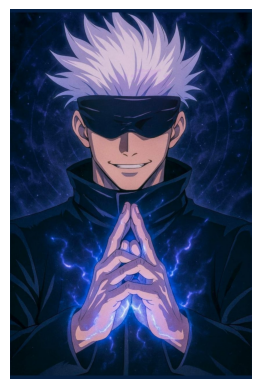

In [19]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np
import cv2

# PASTE BASE64 STRING HERE
base64_image = """/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAYGBgYHBgcICAcKCwoLCg8ODAwODxYQERAREBYiFRkVFRkVIh4kHhweJB42KiYmKjY+NDI0PkxERExfWl98fKcBBgYGBgcGBwgIBwoLCgsKDw4MDA4PFhAREBEQFiIVGRUVGRUiHiQeHB4kHjYqJiYqNj40MjQ+TERETF9aX3x8p//CABEIBQADRgMBIgACEQEDEQH/xAAwAAADAQEBAQAAAAAAAAAAAAAAAQIDBAUGAQEBAQEBAAAAAAAAAAAAAAAAAQIDBP/aAAwDAQACEAMQAAAC+dJO3KiUWQjQhlEBZAWSFEhRIUS6YgYAAANAIGDECGJRRLpjkYgY6IPS0XyT1vNTMJKBogABDJJaJYxb1iaZoCFYAEhRIUSxhZAkUSRRIUSFEhRAWQyiGUSFEhRIUQjQzDQzZZIS0ZomoQEruHqC1xUBwzWNSWADLEAMTKqL0cNAggEyrnTV6OL6Hw8udXEiqWbZutMzu5YW2WmnudHJ256Lz/QS/M5en57muvjpPS49fZuvm593yk5DSMxNgb5Xp7Hi/R+Q1wGiZzVTDQQDBVVaLRLTEpYSNQAAJyoaEMhDAAAABlIaiVU50mCtp3NAaygJRClAUraDSUayqTlYGsgymhUAZDCqFppmmoAUNpl6Z66fRcPe3T5rL2fNY5VrGYVNWdu/ne9d+EehwWep6Xj+tndrSJrPyPZVnzE+r5jnPXyXZ9LHme1Ovz/J9P5THlmkMmmd175HY6fMT6HBeec3GSYBS1q8nnQIyYMkEAOJGpQCAGIZQMslhANUgJUNZsjJRqrKA1mBuWVcyoCVDAaaDT1G2twSMmDpNIYnF9fH6ennR1c5I1AwL0z01fotMN50z5eya8Xl93JjxDt5mZ7+Kq+i83t2nTwPe4d07ln143yqppcPerPm4+h8i4w9nxehPoc3rnr4vm/S+VceZau49ru4e+deXwvo/OZ8nLfO4zAyvSddL5PW8uWFUoVCihAAQ0MSqVGMTCxyMQEAJRgIahTSzSlVjA3JAzXLQgM1tOwAoaAaAB0AWIalGmV3+f1anp+N9N4l1wlqZU2itMtK9ru8r0Z0udsWjPQSZt153B9BKeT7Hldh1Y76Z1j0YM6uXsnN5Gr1Iz6MrPH5PofLuOv0/nvczuY6cF8LD3PF1z9nu4+vPSebsyPH4fb8e8+YpTOnbx+nq9HifSfOrnlc5yhkIEAEoAUgsGzRDCSogBZoBDc3oKpslUsaKHqAFkAY0AAADTsGgaZSBgAgAJgoDR653p9FlHVd+Fl7vlJyzrDKYHX7fznvN9eZrneJoGYFAMWO6Q3wcu2XVOS25umWOXtzpZz1HFO2Wp4vrThrPtcXbzc95+b6Uby9sdZdMOvkMfO9LK58FaDD9vyvfujwPf8AHl86NYc4YQkEACgNENUXAUNaSmudQ1AMpMCnO22K0iACRgVCZjQAJpwxPUAUMK0SAYACBgIADqKr1PV+d+h1vPYza5+L2knzs/QcVz5vocQn0HTx746ztfLHXhpvLwrs5tTWI65eJ7Y2adXD15qqpigIyeuFa8fbjXNzdOW8+hnrONc87Y6k75bm3F38MZUTqeFPXjceh3zU2eZ6fAnk6R3MeXGkSJUiRktuq6TOKmENZF5tWmCTUAEAyjeNOiM9c4kayYCQC56aAGFMCwTYJqgCGBSZQTU2A1A1Vaex4/Vq+4gdNojrzeU2xqfP9J3Pk+rgo9OM+zG+Dqyzs7lN4vPPVjpti9o4Nbw1O0VYqGCVSJjOKOjLc7Yuc2eTs5tJ6ebsSuPs5Jchm55nRrsjFSrk6sE8P1/J9y4+fz2hnNVOSGF6ZvQiysipwAJVcA1UgFBTvoFWdKUuapFlQFkjJUmZoDoGagXnQNQMAY7HU76YTrMQrmC1VVUVXtdPjey6NoXsOPqxrCPQyOaNc7F1czO/n00xePriK3aeWdVNVhszHbn6AAgi8ywCOfrw03m4yWO+WmXZz9MHJ18lZyzcAB6a88ThvhZ5Ps8PXc+FGkMROsRNPU34/Z8RVpkJrnSqSpykZKmylY9R1kVWYsUlrnRoKA1AQAEo07K0h9IpagGsgAYKq7uC69Pz/V6rrwJ9HlZwdITGr9XyrX33lo2wUu/T59Zd+Rrm8Z146ZdmLjZMyTAABMZm7iqacqmkkac/RRFkGWuVXj0cxpqnBxdvDpIVqTtHZLny6Z2Ln6MrFz9vlWccta5w60iPYXXN+Z5PVyTJIZjqCrIuoBZradmgurd41cZiQYqQs1oFoCwAAAKm7HLe4gQBcQAAEFxVbe34W2r9AZaXcZdUxx5+ijysvaDxvXnM6GiVh0S8+tYnc+HrzWtDKamgEDABgoAIYIaTl6uTroBQ4uSsdYq2nE8XTz7XG1pTrmzclvz7hm3YeD6nkawnr6KcXpaNp5beaeZjrljCAlTQFSGkUtRMIu5e7OdTkk1zIalTBaA1lCM0Y6KRuMQgDEXNIHAihFSXedadXs+Bvde5rzXN6kay1N1m4Z97PNruzTlNcq69ODszc8u5Eac+sWBBnpjWxFwAigFAATScnXx9miSqGBE0mASc+ufTpnoRGejRz5C6SaJTkvoqxCSliJ8Lv824zzpYzJUwA1QAUinoXuTOudZJxzoBigAhqKKNzMDGm07KQayIJXUOtc0ag04AQwY6U1dRVdHr+Dpb9AcPa3W/OZve+DbF6iLlFRHNh6GehfJ0xUliYQJhydfLppsmZRphvQBKIE4u3i7dMdefohgQJBWWqoacCYHJty6JaZ7yAUS5FohDO/Ms5MbiYmLUOXdZO1EKpgZa2xdBCnMIa50AzUwBj1KKOkwTOO2w1kABoAGKlWoKipb1jKrjSDRxL1205X6Oi+X0ehSm+Gs1YhXrm83r087XLtM9M0y1DKq566ROAizPk7+LU6r4OxUac0dSHKhynH1c2+2HVz9CtPGFtlpTJyjahwBEnLtpy7Qk9ZTFSGAnnZl5GmTEnX2nk693mRnLiTaVe2Tucm1Vqi8kUtc6DUIHKhoeud7lEmpkD5aE0gArAQYaFTpqONZ0XTz3Hq8mft3Xz+3tciZVnnXdv47X2Tg65dGhdHlpmxXTnLq+LWNHrWaqiTXOqjl6uPbQNOA9HCrOC1PR38065a6cvVmrLXmFNYbnTtLzZ5ltW0HIV049BoBziTw1VxldMsKSQATVi4+jROXorCzby8s0nNxmCHCuEbRUaO5IMmskMlSazRggmDaNACRNNUmCAlYVYhmpWirYSdPO5hdPK8vodfn/AFNa7BFoADQMCUQC3wiX0ebDqjPr4mvorDo52Lx0Dh9HlrTPn6bOfq5lp0c3Xyqa4uzTu87uxXxdHLWkTtp0cr5Y07M8RJaVtpx+hg0uaXTjI6R2tUM2kYgJasEcNl+dLZIJkUVORc2RNwVWdjHnUoOdGnUjWVJoKmqIqRgQ5qaGiUAR3D0qQs0rKtKuHUyLJuQu8qPQ9Dwq1ffPN77dEmtLMNAIQxc895Szi7Fro51m9/JoZu2vl9JlPZxaMM9TWoS0APs4unKcHI+jnVRWO9XABnl1J0bcuWdVJOk2mmhKgMtbliAQjj8/3Fc+Gva508xdOMk5bSRakiWsBoi4qaQ1mjChMEDhNqnNyAEJBKDUDCwAoYUNFm8PPRprIEx0nVCdVS6qrtw1uuhZ0qLAYSgBHJ3Y2bPg74AJqG+azuMnKTTrN8/VSvLSHUCgAYb81m9DlXJS1NtESsQCMzRzKVy49zNtOUaACLLXByp60eQJ7EeUG/NRJlGmUJVOaXBDJqkBADsC3WY5GgipaADNlBmsKoGbyCYIBMJakLGIhjqmGtLu2jV668rOvZXjM9h+X2W9BKLIyl2jmyk9N+MHacEp7p4dTXtR5Nnb1eLpXqvzRetcuNnrX59y9pxi9hyM2jm0s7MubmNu/wA6zuPPJe9+aJ23581282BZ39HnVl3vio6KwdbCZhw+qJ4c+p5rOcOMG4DWEVI1kgcTQ6SpBotN15aYkoOYAyBAwBJkpUuzXNGxUmVJOhUgAQGFNVo+jlC1DLvIq3Po1n3vn1d/O6vKypKcLUEWZssgKJCiQokqrzRu+druooC3bmtwwXQjB6yk1nBrkiGJFEhRIW81GyyDXp4tK9u5y6tF5EZnv5+N01zY+l52JA3CYU5sqGOCBRSKrRp7sZ3niIDFBEAC0BZI1mjRTAsKTEmVSpaklEIYUrzoQQxMqp0rq68/O2tQ4vHbOM5uOVGmo0WMAABgUAAAAAAAAACgFgmgAgAUAAENBAmgES1pGmpt3cGW89vD6fmkgpGgUqUU5mtFBDHIkGRtltsgVTFTggMVASgFUBYLXOyRmaAA06GnpTk1LVu3EZmOKQmOJqlR1crLlupc0WVBhUrldb56tqN9a4305JmBABQ0wAATAAAQxMAAAENAAJoGm1k2o5jqS5N5oaY9RGekaxdYEo5dNuqyQQ0AIIqbVSUg1zqmGdJBzqAgAi8wWgNZ2x3w2QHOgEAFOpdgILvF6bvPbo5xrmVrSrzmqhjydzptFHXnXp8/Sef0/Nrp5unmmdVZmwyd5laQgYFAA0MQmDQAAAADA00t59HjFwhGgVMIAQAQIoPQ5PoZ05vI+j8ya8pXHXzqpZdRptiUZKdEQMinOumQ0CRGuWkVIGAmpQaENS0BZpntn0klGUFLNQwGnSEQ2nZV51pLTBoG0DYU6mqr1/J9jn18/v44xvq8X6XwGee5nXLSCqkaAAGgaAbkNHkDqA2rnDV4uulcwa5ChkqWyWMTsE1AACey5U0ej6mE8vSnzdtngxrl28pTeiZNCHkNqkgFtlpSyrPJiIuKkAcS7VSNkKlmsABI1rF6lygaYJpksJaaVly1SaIpBTcho86q2q0v2/F93h283sx789OHDW8vBnSevmhpwwKAKAAABMiW0DVCK0rFaQiQs6EOUoNQAsYgAAAjTIcr2y9Ka9LOevn6fN689d48TLbLt5qmp1CLUTRQhSCSh3kxyEAErTVhtjQ4pVSTJQYrAEBAAFTWgM1JacIagadNMEDgclUGmmdXJVxVtfQ/Pe3y659WU8+vmPbLfK/L9HCTjW2WuaaYCKAYAIhoAFG2JJohhBc50mqGBqJgIBAAAJRnTLt1RljvHs+f1VpbzzvxMtM/T4xp0kyVXDFnpCSmYJpgmUgIbSEwGmUFQqTWFAUgAAgaKtze5DYSJ5DRVK5pJkCYVpM6WkFIC/Q83TOvoue3w9PCmunO8O7zsa34PQ11nwl6fDeeSpawmAAAAAC1D0jPTfum/MPW414Dpw1iCkygFAATEQyFd+jOmWumGenbj28edR0cvdqdHl93h2TlUdfPTkqkXaSZlELME1kNUJAAA1SqiSrMxakMhBDAEBADoBWO4ugpaZsMgTimGiGhNEDCqEDchbh11+1872cuu0d/Bno55xOzv4Oya6ubpWNeLwfUY7x8yetwb485SuUzQzrr7s74Nwbn1/I9fG9Zozvz+X2ebWfG5/UW+XlHdjrHObUnOd/ZnXkeh6d4649Cc3y+f28ms+n5edJfqYcy8vJefbzJCsuWjQeWiAwQADQqmiRkDHTi4pA8kDEmpQAYzUkDFAKGg0pPpGh25q4xEMiqnTaZuSSiE3JciFU0DQaVlR6/X4fs8fTn4/0EZ1wdnD1XPogY6JUlUaCcHN7Bc+R0d4QteNfPYt859jx/ZzrVMz0SZGfD6RZ5m3arMrolkoVMYhied5fo575z6dLO8fIrHtwiGt8kwASjbJupTIQ0AEFIoQFIC40jRJrJDUCYqAixGpIGaCcNM0Lh2XeWmhGkmbpwXNaqm0klTCVTDmkKpY1UjaDXfl0X334/Zw9WdcfUz65F46AEoDEMENB53o+TrOSDeI9rxfZzd0zPRAQhghhIwBoYFEXzs+b6Hm+prN+RXFvCzcdfO5alKmqgCGIKVxVSEJgObgTGDKpw5oQsmggE1BMAEQEqYQ0FDTHSWprKVOpRWmWlMFTkUObRAEIdALWsqAKmiqVVn6PD0cunq9HH2cPQNOaAAaYJoPJ9biueAu955fa831I0aMbAFABAAAAIAKOLu8y580iu/lJc9MympKSQJkSNSgA6i6SsIGwm5JbQMQkKACUAhAA0DAACwTUoFkFTTEypBCpqrLjS5qakbynSSibiBqguZqp0mwaammdFhjjXs+j5PqcPTQGNtoGhgJiGJyz15jvi7Q59sTn72AAqGgGgAACo8b0vE1yllenzQqmyZtRFAQBA01aKotqpmphVNCaYkwVKSULFYnDqjpMk1zoNDEFDNSRgrgBMlBMGqJaCrg00rPXSVaJVLMSbJYxAw0i9ROcpd4wWLtpy9Wb3+h5nTjv6YPn0AFZEJsAoIAYJiAGiBiAUCRnFqnSmCT5a5fH7+HpwwqHee2nKanZPPvuXlpOmbbkJaVaTY4edtQLMsqaYgScRebUIDNAIYnSAGnJQg2UG4xhBShNOEqSjQNVI2iyrVaXIUKiJGigqpU44uuSMASikhX0c+y+njvzN+r3+D6mOvSMxrzD0psb87y0+lfh91ncYNdTINjGjRTQsXw2a45etHJ2W5tBJHj68e+W/men5OuaQTIAtEOy9cSzpfNt0VOmdgKYvMIGqppACUAmJNSgEAMQ1TcsJDJgA0VaDUp51WkzVStYiBmQK6kGVWelAFPTGqtU6jEz5UEsVoUMBRpoa5WvsY7VrpwdvNhJ9Lr5Pq8+zB5qz1Vefp1q5iqSJVNNNiVEua2JUwUaA8zfwtc73nq6Y5/K9Ty5kTUyACYWjkihOzd57dMwqmpBwFTSBQIIY5pyyVNgilYk1KMUIDNYFgBQ06AAaC6z13M1RCpMk0VSwhgihVVaZ1pnG+OGefQsXAqc0acDRYXFL7PVy9M78GXo8GsYez5eeX1JydfPsxOUmkYJ8e89r89WeguBnbfL250wcqADnvwLmW9uvHfXfkx14/N9Dz9cQEzSQAEC010y1ZrJSekqlSYClzCBZMNKiakKWhKSGhK0GQrgAcMChMpMaCbqWMq0bQrmGmod5aVNJFSEOpKu4rS+fpyTJqObSSlwN5zchmQ0L7O+Gjt2+T7HFnXHj0Lpyw+g+frGvpTHXn2YKUz0LOVdas5dNmJhKAKS/DZzym+vCvQ5PVm35ndwzXHxdvFeCBojS9M9WtZaiDYHVzploOaDNzAmoAZQ5qQcCaoQZqAgYqAIAIYFMZqDCk3RmXI6lVZDKigmoI0U3UiIdxpStGmiV2citcmTRjWrxrU1h1Zguic66uvx+udPdOfp5d/I3vPry58e3mua935zbnr6F51jsxErBA0IxA0ebZj5y6uvCU+rTo6Fycu2nHy5dOKy1NcppSlrNLUhmjWw6nTpCNI0manMlUpRNi0DRTShUIlNBLM0ABBAN1JUwwLLA0pUqQKKkdSgyGgYIGMAVaRTqdJaWpKu89NFzdnLm5zU8qAQVLrQjSxNzY+3hM69vPyNp09HPHbTDLqhD3fBy5b+lOPpx1oQrJYyeBL8Gd+nDqnny3nrriLnSAsaiYqUSgEAAAF6y9x6UaJONIVLMEgm1YS5WpVEDIEKBBAVIAwYUk2IsplKgIGkooQCqYGmAOkUgTYtcnZqnWrE2pHc1V8/RguE6RxqAgadACa78bt6MtttOI2ykQKBoXTPdzXJp0EKklcqYMbm5VJ6yy3ZDUFQnmgMQ0AAJpRqzTJSd6Z1kzcVCHmDd25ApCGpTTNlwkNNQwqpVBLdEt1UqoGSRVZhpDKgZkhoKli1gqpQMTKExNuw2g1UmzQmDXnjPndAbOTDGhWhAWAyhoOjfgdvThpepzq88vS5erg1UpOZgWAAAxbPXcOWZzWmZoDsGOxKkSNSidyyVmDdJvXJ07tTS3MyyRw1Si5ylUpZGoBoBsBOqApUguJkJDnWANy9Smq0qdJrIqckNw3N6SrRLCSgvSKooaYmpl05WsDO88XZ56bmaDFdwWVGhUNME2IYIaAaO/j6ebaAvCT08GuMp65zsLaua4xUMzQKpDdi1z23DnuZZekc7WckoBGgq1MNctc06uXXpN4tdYpuIhhExrnmyNZJsoAFQDBU4Fkk1mgEMCgZYVNaaOa3Im5zVTQMuxJuoLmCm6uc4Nc8zFEzJDQ89FGbFnTcsYGo7gs0jWtMGGQmWAMQB05XntPdx+xjeg3PR5XoZ9Nxyed7vj65883M5IZKmFhRrtM1ILOeemgxQAAChTTsLACtduQrrnHTQWkExokgpxKcqmOKHWmcXnkgMhNSgAwLGMpUnVXndlKlpBSlVTSUiF0nKcrkITBAGJpDedysCzNa5Y1UvSsacy0J2Pq5XqdOHTfRwnTjmSBIDDSarrD2uDr5ei63WevD3cXp2c/D12fPZ6x18cseUO7E5xtrNrloAlQAFKEIBq1oFvDUVKwLACVXBWt84dMRWiWqTOmxDmolmKgISqZQAYyx0PURQTaqqUzbrGSyuU4TTABAGISiiCVoJQCLrKty4ssyuVjW0q95xNomkSyurkep3HPXSPDrdnHWmclbZ9+1dB18fVrj08fPfJ6vjezXHl2+fXn83r+X28k6KLjXn6uSVJrlpJrNCtDO3iOB5qGBpmU5ZBpm7KE7AChUEjQASu8w6K5TTfNA5okkbWFSEMgKKbzUaqCmhgIRoAYAACSzWglAAAAAAAAqqzaXFKlpmzUHvM57kvO7jNGFj0zrc3Mr78363n+njtp3C8/qPK9Hx0x9/xfTTp5Osz08zzfa87px82aOnmE5hI0xqLeZecLGmncIvPUAIE0oAAAAxUml6Uu8xmlyCZKgAAAAEwbkKebKZekDDIZkCYxCDCgTUIcOQzQAAKBgmCAFCpQhpQYDRY2nZtk1uXWBm7md1JbrN2tZKno6Z6+zLs4+vs5tebl0898/R25RtjOb7b5erl25+D0eDePGXRn38WCqOWrlLOkMzU3rYisdRAYoBQBABQDEx0qCqzcogOem4CySqE7GACGIAHJAMVgWIAEwlk5tEhalgmCYAAAyhp2CZSGooVakDJU04AdJhZpUV0mAzjpNMq863nR530zfpef6rpfoYdHD1HF2+QmRfD346dfk+vlr6Pk+tz7LzfT45fM4/U8rv5Mp0MZyLWdIu6mr57FIc9A6qSlSTMkwoG6RVamc65ZomsUAgTBASlTpYAaglMrRcDc6jAoASXKzrQi7EqRDDNAAAAAGXqSM1EWVBShDJU0xqjUhjhFKpGs11FWSWhJg6mtR2t+merrnq5evpYcemPldPL25R51HXzndx1Z6PqeV3cvT1RouPby+T0ce3HyJ2z6eXOqcBOOdOWc7LBbvI1ATzQTBlaKqW5OkhnFTzoBghqUAEwC5djgJUxRVEaCZCYFgbmYHPQ0GhF7zKqZQCAAAYNPUq4064vP0OTtMVrPK5mpLiXGaIM0BhSNRJkqZSK09SBuFc30zXqcPoztp6HP0+f0HNXBqZ8VcvXzvWb9XmJsrp14+nz+r2a870OHfDj7ueOHg9byu/mWbzc0By20MmrWimplQzJUqp2urrDHo5OkMnPCoDnUAIDNAAAAAABUrJQABCAWxGsyBnQAFw7Li1qSBmgANFNosqoepsoN5GlLW2Gm18/bx1KZw0mmVNPchlRLpUaZ67zM6xqTapOzsx6uXq9FBw7cPH18HXnyepfbHncHued3549SrNyx6+Q29Dx/WOzl648/by/O7sOvHz5uN8EqWNFK9Tfm2x0lUcqlRSZVX38Xb3cuHVy5TDnhQCEBCAzQAAAAAALJpAZAAgYwNJAzQAAC3F7zA1mgAAUwEGnQ0ajBjsvrL56klUuVlsDTO9A0fSZzoRnadz04brvjCzoxru6eb0PL7NQjj04OLbi7cffvDqnQ8f0/P6869Tk7eW48v1+OvF9fy/R9Pl9LPp5/H6/Lz7uLU8eenn6+SUzNGg3yvPZUtpciqIu+rpMPQ35N64uXTLjJGciTmUAyQCjTBAAAAyoqQAgAhDRQGiTWaAANI7h1Ua5WAEoBQwBp2DT1HVPcpvPrJlzxtIJUMFrnVVtg+s6DPo655FVZyu7l064w9Lh9Pj3v0eXq8nrXlEJU6TuZ2a7xE3h259/f8APexw69M0cevgdWFezyezPL0+b0HD38/Pp43B6/ld/JKBlDunDQa5a21pcd8qcjnd8ojIhrlUBmiZCGoTTUTQAAAFTZAEAAAAAMCpAzQABpBgbZ0tyAM0AGBSY6bmtZrXLXrOrj6ufrMlc+eyxqFVZm01KHqPp5r7ZZv1dOfDnrmnT1zXl9nd58a8ukD7TlfqPGvKfqYVwlx1zGXRNzrpzYZs1nr25bdXBvz6elLPL38rzvX4/Rw8xOunlFeN00zFrbLfo6eLu4ujKXPnqBYJBmgKKQAgBjIAlAAAhtzSAgAAAABgWSBnTRdkMIACry33MBqVoYJobTsGqsq4rpOlz0emcU7rmwWs4sjQ0qAbsmpreNPQ8/ftidr24egwevHu2dc0dYcdvDfgTufk7J6GHLhTwqumc9JupRSc/TnFnodnk9vPo+D1/KPPz9Hl9Plxw3z6ccyjjt65Xu+r5nqeZ0vPFx5iTnFAUrGgGyW6sedZqmniiaAHFRU0AQAAJgAMCpAzSpDXO63nIDNNsdamdc6QEgAoAjael1D3NvR8vbtPW4+js1rxZ7ePfOc3cmR0RLkUpmWVZp183pZ6iJ5d3V9eN59YctiOCx8Gvm9uOXV0asxYZ6tUSrfTpxeTl9iJfLLjpnJapOzHl0WyevefJ5vV830eXEra4w6MO9cOfTDOlDXDSVLFkCUAHSeopc5oBmppwJlKpokCAAJaloCwAGBZIGdABWmOmsvPfKpuHm74dGGogIByrARtFU0al3lW5tfO9ts4RZFJ0bcnV6Jjl04sK50uduvDo8vrfbtXDuHPpjWqx4dZ145vrjPVzKm7ib7ejOuTqZjQLnTocaS58XoFeOvQ4emJK1rGpepp53Zh248elV6fJj6NefjZyXHHcpvlqZuM1ASlLSyVUUppYqTWaqlwwKABDUCcyjVABYADAsJ0FzGs0aDcm+mMDTPGt4b3MgMhMViEbb1JB0VLoaAaKqorU19HzvU7y/PvHpk0z01y6u3k7/B7+ni04ufVJzvMltBlUp6OvN4+7Sc2X5GHXn6/FxLWFitu3D2O7wevh6fUB+ftOO5m+RXoeb1z6WPL6WXjm0d+XOs+z1+TXxunjxXBPHdKVmgGKDRQnpCp5QqnNSazVU1AmqYAgISHmjDUAAAGBqUTQRbMi4xa2599HjtNi0y2rnAzU04Gq1NY1x3BoLilYJrNKRTqb206OWu2OuJ6+049KeZ0ej53V4/bnmRK5foZcFaZ6V2ab5oHPF+Pzc3o8/fMVuTz7a6zy9qz3jWama19Dx+vl0754Vw6+tBxc+mW2R0x0YI3nk5+zj9Xkzmo5lNLjtJkqAyGmqBAIi4uKlOeeipqBNU00E1OaVNABqAEAAwNSWjGtDO9S03rOFXljXQRe8xrLrKbjFmpqU1y33K598KYiG07Bj0FpNK5uxVJuXtz6dsdenJ6Gdq5PP6Wo9XFvDXzMbXbwvpj2Ty846uMjvx467KzpXmsbvLdVhHUbxzLpLObqyRos757sTzpu4Hnee815vpcPbz5RpG+WZZx3CaxpLWVhhklrlKMoM9MqIuOWiouE06TRCQ81sNxAA0QADAskDOgArXEs3inuc+sTi9JL6ZiLzxpUnFb569Jlm5hgDc3YxvZUr1G4VDQlaRr6OOvZh28PXEoxvT0cDl0456sbM3M7zosqsnUJUVebjfp3nXlT6WVnIutHGtc7E06AQxOK7OHtl5NM+mzjw2O/Hjy1z9Hkzmlw6SOuexMqCyXI0Iits6xi45UipxpXFwmnSVRA1coC1AAYnCqqqQNTIDnpjVgBBtiVthvnU789w8tcloKs2ZluQBgxFOlWpW/Pp2j0R0kTrnhLVJekdPfn1dWNeX251HdL0583NjeuPZlZzjesy2Si17M3l7rMaMdePWe1+Jv0x6Z4/fnXTlqcenJh6Ss8mfYz1PJXpY6nNeOmp6Rxehy35Btl6OPDG/P6PJCc5CDnuurD0Olww35DQyWL08qjFUo41xUYpUVNNhckUlYCAOkGhNs1DIWawEkDOjXLSyC4BMg2xqoNM5XKctbZb9MGFwAEAFUx7iua1Nezg27y8NctZmzRh9XP3OmuYvP6tdr4s0qPRL8zbnlt7dZw9XSc9DCCc+DrjSNs/R5uTow6dTkjpyuvR6/A9Hzdu9YPl02M3m1GiXyF6XB15z08zrq5PT8uF53p8Po8+MbR18+bZz31dfn673z56Z8bKI5HDWNJNZrlkQ086pi1kBiABmlKibHmKUAhgEgSjQbw3vGQ1nQAXlRLDVS3rC6YkCUAC5es6yLpkqaW7mu+OnCujtnltlxt0p+X2LbLs5dcuc1NpfPKlv3xluPnoZlUZ9E9ceV0LX0cO3n6a4Twu7Dr7Y5YubtdBhNerwdr4d1XPeWqHjU5q68tdGHbn2889XPXDjs+vPzx7ezxYZ9/Nm6x3+bnrnleXFMt8dQNQppYqGLAGdUJ3IAAagOd5IFnQBAmDAqQM0AHthprNZbRUAZomGdxrNaZUtZQwGiwuNLAHuK82aud+/ObWO89evH6eOrQcfT1c95Z0dGJY6nrOlhw6MTqMuk6YfnWu3Lph9WcTh2+Gz0eh857+ufIeg8duHh7uXrI9TyPQnXpMdeHUTWbxY93B1z3efrocnXyEk1Lsjm7/P9Hl7evxXvG/HWWN1jccNS0udqXIIM0ESkXGa6ihhVlUG8rMWdAEAAJgwKkDNAAaE3I06TFa5ZoBEaRcqGrGJ0AWOpqhhrLc1qa9WS9HHHTbs4enPSKnZE3kA7bavpleljvx2NPnsaNQ4+rDtxx6MtenJ93LvxvN4Xo+T6fPff5nRvHr7cV8PV2cHocMuHr+N7DeN6Z89sDHRY7o8royjvzUa487NyjTz+7HWOEM9+bow2zsyGuHQEs6qWEgsgBRMiLi5TaNN5M7xADNAAABMGBWbSxqxOxiaGuN6aZ6LUymo56dosAKYqFVPUETYxUhrnv1x1zPXrYOOPplyoukWuk9TTXP0OmJ0T49GBjbavXM8/0vJ68dNst9Ts474Mzj5jP0+UJqa9PXz+7Po6nFc9cvfydDfXeenDWU65NAia5Ob0/O64zi5iZtZrzpSLg77ufKvbLr5sVcYqTWNIZLJSzZBwhqppVLpSN4zlrGgAAAKozqzRDLMZ1MXFuc70Iu5VS02E+kxjXLnqnNBVVvKYrHMgNNW0XN9HP198adWG+PQY6zz6TQwaehc30z1dGG6WkcezAlbjbXFeR2cnbn0rNVXnVz9vMsrzkHJjWvb5+nSext53Zz7rWJx09DTI4dOnl3xZQE6ri7ca89i6YkazZGso1iw831OHpx5Y2xcUnPLYClemQaS6rJbzLlTUaBGswMzpGlEWFiFJZmo1MykIxqpTIdRLbirN5itxRrMsbBctKCpCAAYFU5epXZydnbO2/Ptz9LF6HPfnOp3mkzrkue2nuq51AY6DVXFWsZjihPvmuKefrwUzLGuemWNNCxqrz064vq58+mfZw8/s5d/aXPv5fXrnG95ZjTogWd+bHRj15yqkQHPTaCuffLXPl5erl6+WZueHSRrNAJQA0rF2aidkTqS896RKTdGM7oxNJlQEMZZK0DN2iS6IpmoNSOhDhKBolAdACMAbmtL6+Tq7Tbfm6eXov1OPr4dOLm9TPc4L7NOuc9086bh6wBdzPRnnkZa+TdLkzn1+G8ayzBy+PXox2y1UtIzX08/X2yuW80KhzPqer8z7nL09bk5d2S+nFpmO2HF6c6z5s9c6nOvT5uOueO3iHlrhvHPzdPL18yA42VSmkVMCalAIKkNTKrNFFU1SpCzzdTJmimhFFShyJhTSnNqQlNU9QzCAAAABgBQ0I2itOrk6urXp5erHbv35unz9gBQDpli06c6WazW0TQ0jPw+iPd4ufOs7yUufN1Vxedb5aZ7IRlt083R6JyxUcg4cmu/NfbH0Ovz3q+f199ZKa3hVcwt8llNY6gLna8v0vOSObq4+3LPl6uXfnSa5aBEMQCDNAAAAAEEVeRW0zepkaZY0xOGBqUKbKlGdAOC1WoQAmEAFDQMQAFMTBoSuzj6ujXr4O+dejv8AIrl19U8rWX0dOXTedc1kbLk55fUnxMOvH1vNxn0+fbv8rTpmcejn47UufPovPSXbLbDYESadPHXWa5W6yVTzVWZrOrzfTPZ1eWmvoNPnuvHf19vKeN+rnGWNbHnRL6HBLzTi6+Tpyjm2xvGQXOgiViAAgAAAAIQCgANBrE6amRU5tAWJBKAQNaU4FYASjTQAACgAABidDQldHLtpv18ut6dDVZ6dPU1x6PPn5NZ35uXl68eiMtuvEcrpzpSs6u8tbduXr5FzTnz1aZ6S74bY6SBJTh1d5adJpz65CEYtkvUqs3qazWep0dnl1nfrdfk78vR6XI+znvzHUamOOvPvjzw5nNyGKhkqAAAAAAARDEAAoAABcDACpAlApGhWJhKNAAAwQAoAAAABgUaZtOvTJ716CDPapy4pnp4oNcgBm9IeycCNy4fRzb9BhUZqQuY0z0l1y0y0kCG5dlXmaXKUVIpRoRuQ3ma0lwJWvOZ169eR6Ge29JNc3L0cW+EgYiGoEyVAAAAEJiGgABQAAABDQRQGkpkrBIAQxOgAABgIAAAAAAUNAwLNejj69XXHLHOmgZYnYAG0aYaUJRRND0yNTWY0rJNYppnpGuOuOkg4LRYIRU1IJqUEQwB7Ya1mqkAAER2beb0N68e2NwCMgBQENBANAIgAAAGmqAAAE1AAUBpLRKASAAMKGgaBGIGAAAAAADRQ0D2wddXJ1YVALKnLouNLHm5ViJGDoAp1KsJazTTPSXTLXLUljHIrNcxKyTJggAhgUXDW8t8EaRKwA7MNdMJFmAJQCAAABiusy4yAFAEAFAABQADEFAaiTUoDhMKAAAAAAaIYCaGJgXWkLSbJNJlhtRpeHRpymmeKwLHtm6gQMAbb3mWiWoEAGaaZammWmWohGTJYxFMRDQlYmMBBNW742zEDIDQ3x15ugBYMRAAAAAQAVZN1mtIhASgAAAmQhggCgNEmoAIaGAFAAAAANDRN3U2GoMKTCBiGBQ0xYdCl529M2sNcrAagY7G0txCMaaAaCDXLWqz0ysQjNGKmIGNCAhgUwSNAPbn2XFbZwumK0QFgmETqoyW0y5lTCYQgAuA1U1uTOizYAlEwE0MAE1FAaiTUoBA0DAoAACAKpWPWQChjAAAAAGJgIqiVLpOUygEgADQNAAAAAAGuW1PHXKxAZtSFDTAAQOBhqICABRpR0GFVqQ6pAgmAmUgIJoM51UuauYQEpUhoprWSLFgazQATTgTRQGlKzWYLCCwgsILCCypbBMAABoGIGIGIGIBMIdBJQSUElBJQSUElBJQSUE0A5YklCyUElBJQSUElBJQSUElBJQSrCaAYgYimIhiAAAAkoJVhFMEMEqCCyILCCwkor//EAAL/2gAMAwEAAgADAAAAIThhQTQQAjiDAgijCjBjCgBghxCQQTiiCygjDCAhDjggjCighihTTTqj7RRvUACfS9351fDxfUscGyjiFAJ/5fgiT9+f4TfSNMcQRdIpoFfQXJgpYg38U52eb44wXCm7nPi4FPeg/wCliV+3n/8AHN50+60J/wAeJuOAsUDsm7XX4be705w2JqCVUef/AOZRA8prkxNHfE7AXHMMTKvssaSZvM3F/wBrFCmc50obQ1x7HELAgk6nQbRLOKa2Ki/N5aXt++TlB1l/ZH06+40q9mQczBgXfTyKfEvyAMLLfnKOGUWRuBh+4C2lLAPNXlC31pAoTxxAjdHY8KMPzaa08gZa/cZAC2Y/HEpwmp1MQ9XqaR0ad54GAzgmGABnTlWb26AqVDVAPamZ/u7zIov7z373dUFI8kYe0BLluNlGuW6gA6XB9baU20mrBHXB/iB80W62crUpbNX34zQWAcUp8l3u3+jFH085t6Wtxd8Fm1jHhh2bFI4tGb3Y0THNp1oXITVG3S6cpte5xKaTBrOl+7KdV/Iwrap79jv+N3HO9HyF0OrVVgAwj6HHp5Ipmu7Zj5J7As+JXKonng9P+UPlx7d3p4G0SQr2agYzp/5wAF8xjDXo0Ws6bG2UanKCK3z0IknwyGPaKJhF/wA0PSZ1/YxFsT50O6UH0Nr28X16tWVI83/Ud7Rsj3woxQWocQUpWwxNldieyVsyzyC0w1MmN2xjbSzK/E5ekViL/wC2NJ1iHrCbEj/wODlkeiczhf2NAc6ENCZWbEha2MJxBehlHxEvtFi3cUfuhaM8LMjH56ltXnaIr0WNm41jMXq/Pb0aQWnV6nCiv052wqJANGst6T8Mp/8ARm/A53LXsSU7bdjibc3XN0r5BZfN/wCOzJJy5bS7b73ae8wdoAHvhjoCr3rnb16RDFetnVhmM+nXY1I1LuWsKBfCAu5vXBOC1QAjDjQ8fUcnUAeXckT1+qn18PRkxU7ijrPr5lnBnuqeYD50fvmGpbYf++9EuAz/ANmsy4hY+PHEHR75oBLqILb2XxexbbG3HWz09+2R6y/cEVsuFqck9QKKRFZ4Xvs/Fl73gQuSwL4EKMvfMIVXfoIZ9EgGebVSvFNM+WNOs7w6fsupS3JvXOE7ZiU9DiWrSgIoIcsMPeu9CXzVRFsFv0lffnukqgOr/U4PwcfnmuGGrvwHLiI07DB7q77boi68CASK13ogUHdE9v10Q9YTQJQ3JIY6NvX9euMRaGHBDixxwEAdEnP6Yhf9yZto4S2pdE+c3MOPt8J6/wDx9gP59VNl13Re1oCAQgChvSzwZE+O8zaNmEM2bBDxtZgpHwZICDDop9zpTrdhhqFNH1mqM4l18AZ5scOg99AXCqeZp6id7nBLD3RKfChLMnhLBVbXFNZ/rT99yRlJNATu8ghmKR3ouDfZarQoNnbLX7ZcSaOrQNvBtfLB/wATw5U+MFH7Ker05dqzDAAcW3SBvM0YzZxcbcx+e21rPU9BBXA8yXcQe/dGUOK/dHS1xZ0mGkpWXCs1o0KKZ208S78R1S43qjyW0Nf187mSwUTXQCYJtfqhBBGLWDuovlgA4Xj0oPzxbz96QwRXyDMaY9uh0206+5TeX8Pnyc5lKFn5Nb8guihvNrxKTb7yw11Qzd2QAuIQjxmtCH9cZe4wzQsWJoJHpnioyowpyttngH2XU5+TML6/SScxCpVkTF/7eCAjpDECyUyo/wDanZN4cI7Kb/v6bJPqCJoMqEifRVVm1upML6c18OF/YBZ9lGOsNJ/sVRsDOlbfLEJJBmBhcl9J2MxMfPnuNlTbrwi/+4OmGfvlFvn0A65dYsbUYjtF0dVl4Y0UciQ8+Rr0dUuGF93CpFSq77zwgLXUH2/dULJK2+21XlNEtOoPFZnk5FpCGGtFOrU0WdOUudR7XkByvmXnFv8AlnUEBhgw5Ep9vkNG9Hp18mOzWj/Emy2qJ7Xp37VK+k9DC7FjDN3ZPtcqoaxKYJy4HHefE+CnPX95zadThhWKcLWS5fHpaEe829H13ttFXjVennYcAVomF7mFxXHxppB/v8qssPjozIDZ9CVH7PXJLJ9Cut9vN90Ztqfv0GVsJKQ7nMYdomkJXDrLHfe8N6oeOje7nzZBJvT8HY73j0I9ah+YC2bSzXxBCkVzuxAChtQdHLhWQZy6/TXQ33zBNPd6yp4OkHMYHd3H2jf4eB9pbD2mjJT50elYYuoW4BivtNLhkelpnRT2rAz4VIkZ5HlJg62b1601wCfbuMv0HNaS1wOsNuOYF4A8mZpQ0ABvW89AkPHkJWWihbhBOkB4ODs+FG12GdhYB/BGC86pEpABAtvWHHxaLW8xBS7QvJoHe/rhDsbGa4M2eZG2pFooVgfueLDtxoRv79R9ZPOeXOFt/wBhWLXYS89nzzw/G7Xt565yupQKJxGiByu7kwS1PPKM3tmvvrmx7wPmWT4SDAhfMq1W9MjQety+Lu9mvHgPwf0NgryzTzSQQl67dOQmvo8s/v77a0YVti+N77SyMXsqiRj2AtCbQT28rs38WG5UOHlrkfmwlnVgA4C5oRSTtxcMYmmL/cmu1UOhJfqRiYIOjpi5a+iyDAva9p4f2p2EcQKCiAAQWk1+BYxWsuEK5urMN3S4ROqRUJCSrVMqBo+46enjd7t6Q/gaHOSBfrBbg5aFEg+LSGUIGX5Agaffkd9HKR01TSkVwLfvvvvsAw+wPPPlWvvE+pW1Gs4alUrZpFzwwGqwFYLhXaxdCkpXIxq/KHPPYAQ9wFPN1t/vIs5ZnV9rL8O+qbWUyi7E07gIG3uA6jzmUbU46FvPOPgQQQvNNczfvgMCAJB/IyKzOgsf0/R7FUsEFoO3mc+nNKt62R/PLqPPHqT6PYw+dGHKcw6KelHGuVNrolluhs4f7Ydr3k5qc97Xev7oFLtGQfazqBmTWoH6P0hJ4j6FG+ejZrHNZzV1/iEzDXOm+vYzXRXog0PPvVHa/wCDR0VLP+T8ZZWp5/Bk5835+ZquMwkvgtYowH0osIwaBFa8CDabz77/AK2+r2o/wPT6iiwFPyprgkC7XVu+G/BucTfXsMc+CwZHQrUI6b9++xe63ia9+npiSzPj8LgSoMLsyENL5xDr3EhEsq3drChfBsjUUyO8++xKUL/TtfrsSmh8Utts7kbQ57vE9OJai/dnOLy+fwhOu8VPouDo8u8/4MGc11pBRtwJW5qObMLoK+ymzkfH7hFTB/x3WSHYl/RJxg1Tk8KM88NDiO6wUv3NzsAD45pKYEv/AORP5bXHVbWEsbxRO36QKDzgiPuOGcAeLik88rocw/Rudpc+VLe7BZo2gvvG0ZxBdnMtompp3jC+pvvoJhAQqFByRUtqwApx7GjPJVFW6+Ylqjgl80C07aVofFpzwJU8CO3+k5HEQCPLXYVeMMJa8PhGl/iL11il4epTXu0Tn/OI4U+tGZVWTH7/AJOzy1EKjz/AjnPZj0KkC8GjPdu+L6W070D3FtTrGC9ixtT9YC/yl+IXinFED/QtyjaXwxAbvvbrYzcp1SEVUTvBUJwJW/FKYciYjCErvRj/AC05DoBr2Ire/wCoauaB5s2g6Y3HdGjFhJEmYA40+sJhjfMqx5JpGNd+FK86wcnv+WDJ1k91zFwEFQ9nUYb3cFXz2fvHC+LBgPoKvUPekNM49W1fCc34W3YwhbuFQ3vQu2yqT6tjR99uljQovQJ8q1X8apY8NVPvm9hRHGsM/QkPitfugL5teZylspqeYsHoMf5ULUlnBcRlTstcP+XsYQX3bRy//wC7sbKN247yi/08Q7gEoNSjxaOhF2pud7UgI8+pDm0wzykEPzzB339n/pPysPT75is0QlNcJKc42of8PM8mFlAizKKmSf0vL68kE88wAFPKiEnDD6NHnH5CPNzuH/QWero2e1Akyfbn0xB67XemFL6kOd/qAAV/Lx/8kTwMOMPS5WOvJrLwbosbAFVid9NG3PdCBkh+uCR7A/8A/qsQX/y8/wD9LHTwwww5LjjdSobB8wV1cu8MSDxd4Ygzokh5PvvuN/v/ALgf8/8AV7hUs+7zXPc1SC+2RKMAJSJgIdjLFPGOrEQRzsEO6hDRid2+oTz/AAFf2xPPNG6owRx9baPFdt/fHHrIjpDAvhh230YX+d1gYfb0Q+EVQV/1f7wQAlsy8x/2y/CGFfvnucaUHPHKECta4Byhj20W+zlfKm0EAa1wk888ssMsgogsggoIEMIEAAAAEg8MMMMMsssIEMMoAgsooEIAgMsswP/EAAL/2gAMAwEAAgADAAAAEMudesMd9duMvPMOtustvNOtPfs+8+svvfOPtOMvPuvPf+edfsOceMLd6xYLAZMyXyjsa0GhbTT7P7FM7beLxVOH/Ufr4oTSpPeTAer3LHAOIoVlzuerL9iFvdxPqGUYuhyPovDAFfzW48dKXT5CYSwXhp8/VI1QuZ9PJuO7wZT3+ISwl7DKqZkOa4VDsssGa+6V0jXcYV21Liv9omy1wDOA1zP69bZSaXVkzYlBKetCvKrFbdimBtGHwWHwz+d1+JjTORESUAd/vLi0B436q5IzJci7M8vbfq8mdSmLyhvbMRUtGiRj1YbP/wD7DJDU5jEgoet8CT4/plgp1jCP5C6WgPwYUbk2gn0MjEFuHpEAUpxUR/TYzw71S9D5VJAtWjUT3kk8HNZ/vufHJ05pwvbwY2WMSLd7TciwYxhIjb3EJRfbSB5xaWABCiThpJUugE6TMoQ1YpOJSjTt7dUCYRsa7LFHxsfy0L0W89sRzon1ybYA5xT1DDNuS6wVgDp4RcBiJ7pV6hu87xFIGG9gP0aLEH412gkR1DhyE8oCM4uPa7LW/D4j6xmgFzP6Gv7aG4UUD5HywEWDz595hhlxxDkTTp8wU8ATp44pcBL0wyeH3iWngqUMMCiwfC3F5XMyKFdCUtdW5UFhBswR+ugByJaio2p/T4AxQ4+RO2FYpHeN4jvy/acF1FBTn8CMlMqn64Ya/BBsg6s1NqtclbRNoiAiRdD/AHcjF9ixpIICGDMz+yAI+mK2douBPjObY7CsDYbEgTg/7K96R9Pp1FWlD/Vnb20l3e/z4UzwCqyhHEStcqiL6pqA0X5PlJUGb/mWGJxFHNO3PxX11LFnfzw+fo9Dn8UoFkWJYAvVL7f6nFBW2Xmq4nVhie6QRueeLFdhXPmA/dUwyrNiv6zGvc/EJpkmOKnrCY6u6n5/QWMBY85+Mv5iLzXkkA4GZBtjpCf+d2tstDxH+UagHCmn/dK0BUxVRCPmhrwy/NQv+n7WhHLtp0w9y3zyF4kq0dTfh+0ImK61JJ1OcXDt15cvpQMTBmReLd5gZnZ/ph6N0t5OmMkjwP1RONEA6+aX6h0FQ5e2PLyxcKG+gTkNoh7LruEglvL8JCDAyL1EiIle1/lk1rTh/otpXs6qqDGpDrzyubjynbXIEeDb5blZsidO2Bm56BHLjNlv6jElS6l5W/2+Msh4u/An7ITC6Wj1/rssL7TZbhpP3gwrnihUuF3pJOkY1s1qM80kcR+9K8m8MEK2s93BTvzIXnNVH5AV5148lbmCfohlzVvvhbaJ83GQiGcFZ3Z7a09YxIqLYbvlwuPtvRCVXfDzArRmcWFZ5L7hBi5QpFJKM+btM5JHPFw+rpPeqtS1my6zTbZNrtW8+O80j2yLXXd5PB7cnXSdSdhHzKwJ/QzYwSCqRLwNXMiMXVDX9VwSydy27lm8BLhNDlN0cRbFHDI3pGTWKpDDtKGFNwxl68RdbJJtX7z7dWBNsLrGq/XxMqTzq3HlnMJ8peBA7gVXZln8MI8widJD5HNnJ/DhtXQ9C0eUlJHb0WhvxhKtREdKDaq2/FmNrj77HcL7Avf9hffvh31VdNTKK/cv7CpLrpgjTxQY6E4hnIyKUemtrvjfzf8Aet4Tg1ah+Ex25d58qhRsvU8drk+3/wB20WbVOzxJnRTgnELbZsdYa4g4SclnvPFdnfFl2LLu4o1KEHBg4yYxKv6jmnYSIPObeCza7H+5z6IIco16BvWxYdFlvnW42Ew4yBu9gLqVUdNrSrLdyUGAMRI4HZnAV2K/ZZPoyGar6NHm8XAkFl5k+2HsuUs/scKjvF62CU5QSWZQ6tZFLFyxlO9i8k7YspeNOG95CuY+L21iYwmMPRNqIHlBY0/ib778oZFTpGij7TPsUkUCotwbJt3dO/xeRsJC2NGUw+gC5S6hMQzMRUeyVLa4ykXgbp3qP96d0jShDGccslym8AwE+sOGUXMUavQRn/1P9Cg/ZI207X9uzI50qAtSsfSIvktIaLxgZ7CI/iJ5tIe/qTScfNAWJAiNf+kiAGFj77dXPcx/xyaCrB8uyt0P3Het/wCdrGcGqY/QpYdtAwigTkPCGZPWk+TBGsZ/BvgU/wA/mXreOd1UWZ+/M0Ktt4M1fnt4sDphudocZ7kTsbpISa3kji2nWNyyfNjaq9INcb7fXzidvo8uRaZ6L3kRpEwyEUMlyXfWfxN2jsiKj06UkRkNnAJ6EnCx9ijuaSVNCVRHoq0pMt9/WNssYC4xThbT7K+EA0leVVCI2f0f1B3dt8BQdmAjaqfo7PKIZEY/bEHG+AU2C2SSuGKp1zLS7SBnaY1S7Mb6zY3r8JZ+l6uqsuU7unlTDbIHCG0LGrA0pUAnGFcll7bMrRQUNTkiVFzsV8LyOXX99W6QNCHEekqykTgeRcXm8kayism9moAXLTWY+sRj721ADhjpOB4SHWendPVTwfJ15QcO+kA3iKwDMnVIN8P967W8BNXGttwy+OsAIhCEqMZbeJP7unKK44P3w2h0bfHyBievQFXCt0jcH/vk2LohqM5vPNTIY2tsVl+P9Sr6ft6fEezFiwz4wfn2DiS4M6yHQtNA42KTg9U8YchxAwfno3oUu/dP+wyYCw6ekv8ARE+TdMZkQkgT+PfWWN2+PKpPIIPgMGYTPIUm1bIMp5olCgnOCZohvyyrxxL9zzyBPDBZT73isMsM/cMPnCrZwwcMUWvXy0ETDVJWsJH9FPydOelKdEIF25735pvwekt8GT/zrXwJ7UQsPyQwmGy8KUhSpmKpOQLUUYIPnhf4gqNU+ojJ8O7GFHOH64wGpreOZV0LANUdYjdzzRNTGm+YqydaXmD4cQRgE3t496wIfNnsMOFbPxWkvV1jQlt25oIX3ettFNzRM9U8qleRbz/NKilVSacNElb+ab4pTLHwgBSgkCNxqAHhM7DZm3S5oZc9I31fcoJPwX82D76gcgpLP0JcJQN/5/C8ZmQ8Oko4QlQRTs3f9qNIT7HDW2IyvcArN/gl/ri4IGdgM8EOAjDmpMkUNv0nWX3w5rvKZsCIFmtx2mtAn4rZqWKy7gAeLeD3aKMsyB09rpMpqhvRVa7A18blq09Uunu50vD0TGXZqPgc2TwG8r9Sv1HskwVLhkXsGWcQ4Xn4uQMG+lM6LPSs5FOk7srwMxITYZcu2rlsvMRn6MFHTOo42LMbQ3P3fke3Tj6t0NbHiliOxrcwaxakMbvaufxtnVqT06LE6Qu/EOXkgutDCZWuMRaWFzVfUoSSLdsEM4hp4eQ0qD15CcD/AJ5we/syhTKPaV0/H0p6+v6upwvOGS7Yh5bEEhlALGXO8xTeRY/nDpGmy4Cx8HGIbytGcncDY+H6xv8An/8AdebM76RW8njymYjULHO30QngTbW6HwK3L+J7n4LIyu6lRDlXgcCtZqkwBKtkDRfgh67gDlSI2V5ge6loNLkzEL1hUYLc4REmtish/Z7Qu77IMPkXCS+Db12DknLFBI2kuTEIdYpH6UEk1FmGVskwmNnRCxSZvoNlYDEmqFaxYnxfD+qgU8AJLXREcsbonOuoO9oUxgvvIZmYe4r8zThu2jkdzgkQ9GePBRaig0YO3DSSWWeb4cMqPSfnHcCVHSIE5ItAHO6JnMGXsS8etvvh3FyRTEMaISoc46Pwt0DHrUpOSQO7kdcxDiIsl/tf2B8WdkjABWlpUlPoNBW2VURSPMb2HuPYKt4f6rEjfpRd3wBgG3sY30Ecv+g6QeqXsB2nqWmSVK0IE5JHm4kSr0fXvumEA0714u9WNTEFT6jAoKgSq1CPXZjhd0WD9CYwwNbiOoIN5TE1MczKHYtf8xf9W3rNvZ3Co+CnpV7fv5SDotb8eJQHK9DCA83I9CY3QnOU/TPQB7GCvTIpaP8Ao/jQZhLftV2R02HDDcRNaHajSDndsfvEf8ysfIZeDSay7lBFY0vvX2+ESaRJxKehl/PNHFPaz/62fjN99iSrW/ME/wD6QnzQww9i5bF1tLxK/wCL9Ia9NVE3ltV3lxDZMDHzNC9DlCQb84GFuANIBHdU3j0C0oES8ELcdRA8tcmmPTgMSabxCQX+gODecggUYp37z9rEAJp3uGEMc0v2qJeWG7wlGM+V7aFyccrP429lwSP+M2o7BQBYGFe4CE8ikaLNf/I1pqBGrMYZKt1vGkDnHtJbcZPNe69R6oR/a4Tp7w577/8A9cs+OuO++v8AbTnrvvvvvDzjjrjvPPPnXX7nPvvvrXbfLv8A+7//xAAwEQACAgEDAwQCAgMAAgIDAAAAAQIRAxIhMQQQQRMiMlEFIFJhFCNCMHEzgWJygv/aAAgBAgEBPwBTi/I8sF5PXx/YssHwxZsb8nrY/s9WH2epD7NUTUu1MpjTXbSyzXEi1LgknHktCjJq0uyHt3tGuJqXamUymN0akakKEnwhtI1x+zXE9SP2epD7PVh9nqw+z1IfZ6kPs1x+x5ILyevi+z18X2etj+xZI/ZwyXbC1qM+LRK1wxR1Cxr0073FE0vte5BryTou+0UhxJRMbpj9yNBBUiXLEx7iVlIcUSjTNNEUUemStG7EiOIWmMWONybJRoq0UNDW/amJWaSaGiiJFbD5G+ydMeXXHSQVMQoVuSl4ExfZs0WxsTL2GRp2Sg09iDprsqMgn2RHcbpnJQnQpbiexPtjXkyZVSSFKQotxbGmu7Iq2KFsePYjFRHJDdjXaBHgStkotN947CTbIqMY2+R5G2VqVmtRQpC3Q1SKtnAlcST2iz+0XYkii6ZKmT9krIu12iSimjVplRYiWzE63JU42hNtnCpFEmLJKOx6pqsVS5JxaMcfsSqVolJyY9PllwoqyUdhmJCRe+xJqhiXtFEUtI5uW5CLbsb2pDVoV0Q4RNbii7GmQ4Jr20QfZMUqZLdmtrYyJOJjyOLpl2rRCV+SM/BmWxCepIi0T3i2RtwE/aVuPai6Zk5ESRTIilfJotWiiTpknb7YXZkj7RxbZjhURMurENRI8CZsRi+WOS7biRGqHurE15KsokhPTPfhjmr7NmomtSI5KemRkSUrMeTx4JSeOVrhkZWk0SalEwunJCbom6gzC7iISGzmRPsxEYGlox5KdPgaTWpE93Y1TFBnBhWuJlx0xbITHy+3IlaGyMdrY2zZItCLIkXtQ9mJiZKnwZo3EVZILwzVPG6ZHKpIk3CV+CMk6M0FF2XcafaLtUzFNqVCZH/5GQlaaMvws6fexHjtEkrGhxsS3I4k4WiYyM3E06naJpeC3aNDZ0+NRgZopko0KqG+SyKF9GhuRJ+B2LgjD+iSrtHcih0S1Qd+CM4tcilQ6ZO4TvwSSyR25GnFkZ6tmW4SLU4DVS7I4dkZXjI8/wD2Yn7pIzyqNHT/ACfaxsRRpJCW5DI47eCUdStElXaM6bRJLwQi2zHjJNRRlzbksmojwadmURRCDbJJwX9m97iViiiLROLGnZGNC4LJbqiUJY3qiQzfyE0+GTgpKhSlikyTjNX5LY3ZCbTMivddo8nkhL2yRF+5EP8A5jNK3Rg57p6pC7USiKJLYhkcGTSkrQ4s0WyKfDIx0CyozZWycmxNkH7RPkZDkx6YxtkrkySEOTIMoaQkb97XDRkwqXB78bI5fbZkakr89r73t2XyiTVMshyQfvbJv3M6e77ZclbIwxqN9o8olwUJE2Od0KbQpKcWStMhbZCOqJkWkmx9oL2l7vthVyHvJInKtiO7GtxkBMstDfZ9pPSNwyInicHa4E3ZL9lyjNyv/XZOiO0X2wbRbHOlqIpyk2yDtGxjSHNDlZwifayEtMk/BJRnTRGLshcUZ5EnY0Mh8UeSKZjemJfkSc2ODiu3J5Ivs4WST+hykuGevJC6iPlCnCRlxtO0QzPhkopu12ju6HcX+uX4x/8ARVR7rlE50tKF7uTU9oRIKkl2TORLtLmicKEhkHRjxXTJqkZXUiXJdle4ji2Q+SFuh01sObIZHFpk8znt3W5aSIttd544y5J4Zr48DUlyhNryRzeGZYJbxdnHZOmjJHVFNFEltfZcozJuKJpqEO1bCaQ7LZghs5MTtC7JdpFFKSo9OicWY8cm0JuKRkzJWZZ6h2JGLHqkKNIfLFaihOi15ImNXyOCRpdiikiONtixmkquzRNQ8on097wdkkxNoS1RfZo6eVppmXFKL1VsR90Gu0d5IlJOUVXgyPx9EFqltEkkvB6e1kpJqhcoi3OorhCqhdkVsVbJRsTUWWpxHGiNVsZHSZkY6SFuPmkYEkPIrIq5GRvg89ldGFNsnBpEYIUbFFo3N+zJKa3Q8iv3olhycwlsSlLhopEW4yt8GSGpKUTHBTi0Y16bspSRHGseT/2Z0lkpGFQtEI+5yrgk9U2UscN+THjcnbM80lpj2xwUtkRxwgi1fdIRKLJOjkjJxkTdoizLO5EkqGI06qoTcEKUmRpJslUiiEbNL2TMUFFWXqZldKkhSaIZLSH2ZQrJQUluKEoP7iTxxkiUHB7kotmCavS+CUHCaceCUIyittzFdOLJK6OphupGHGtLJe3GYsaS1McXkmP40kZ0oJLyyGByMWKMFSRNEY9o9kmZJ7USFEmqIT8E2lEk92Y/cmNUx7mN0zM3RG9KMmySLEY5aR5LMeRuJF0tRKbcu0ZUyM2JpjQzbtfh8Eo0ZMamqZGLi9LRkwV7omKWqO5FKkaVfbPDVFEcdQqzRbVspVQoVshxpXY8Dnk1SIxUVsu2l3fahbCRuNJscD2xRN2yMqZOxxEkuBxtCi7IxpmSF7sjFUTlqZTsUWhRZopEJUzLNJKIxMSEpCQlkGmUV2i/BOFMpCjY8dSsiNUuzVooSL3IxpWPdlCRUmONLtQkW/Bcy5C3JvdkhNIT1bDQo7iw+WTcYsckybSiRlsPlkIuTR6bQpK0iV2cMlK5doxPKQtEfkz1cfhHqikpFD0ryepjQ82I/wAnHpqj1YkcsbJZMbNcELLi07seSH8zXD+Zqg/JqxqPJjlju3JGXLjb2kqNeP7PUgKeMWXDEllxuRrxicfDKs0ktic2iM5DkmSQiMGnZLkw41s2Z5pKkTlbLaFK7TI3Q+TG6aZPK58ClTHKyiuyWxwWKbWyIRcmLRBmfKlSQ5pPc9VHqGs1ikaiy15FLH9sSx/yZUP5Ht/kNw8tlw8NjkWWzWa6PVVkJrUmKtNpHrO/iLNF7NGStXtEmJDhYopMyTIq1YtKgjOxvsl70JEo02ITIKOqpCjHVsaTQxLeiSUVyOTEQVs1KEaXInfLM8bgmTTuxdl2X7rtf6se+xBU0iORwaMtXa89krZZqSHkdjY92dOrTicGZ2xjtFO4iTMuGjTRvYpIx8pCacqFjtWOLUroluKNnptckXpZpb3IvcyZoSxyguT/AGLxsKcXs0KMHxIeOSN//C+9lChJ/R6a8yHHGlZidzT8DeqxydUJ2QhSsfIxt2abSHCmYnpkZZU2SdjQqTtmSeqVojwjqd4pj5GUQL3ZDNKJBKWNyY0rMcd7JZFJU+RLcglpZ1UvTxtilJS1W+THPVFEsd7rk3T3FdbMTZf6ru4vyqNu0tT7OhtC9zrwZcujZM6bLLXTld9oumRdqhrclE0kFcWNOPIpe5GamxpdtPJRGTpGWLaSR6MiUGhJkfIndkRZJKGkQm0Lkoi2dfJ3GJmxx9NUdPkp0xzlFlxkVRXexSmXTFOH8RTh/AeX6jQ5/ch5FYpN9mMpeSoxixvVkY4aJwZzGL+yMONh1EW5VISsw7NoyzeovcyPgipS4FilHk0E46WRqj1JJ7NkM+245pjRHhiQnGiTWkT7JtClYuDr3/tgZsj2RbW5Gp4yKaFf6OKZpkvJG35Qo+TZk8m9IuyEF5K7NDZLU6Rnnpgopm8SctUIMwr/AFwLJ2yMHySkkhz+iOVpkpNvcY90jBLTLcyW3yavYZJNkIrSh89sbGnQuH2SHv2iyMdRp0sUtj8hH3xkP3zSJYoyx0YZuDo53Quy70aUvArK2J4muDHG3uNd7KY8igmVrmjqMaqyLcnGNeSK044IQxWTixi5GM4ihXYtUicWoUTRHgfaDpmN6hqovshra0UJCkkhuxv2nUYvVx15IpxyU/DNftMcve7PUcCGeLQ2L9HMl1CgR6yD2oWWMjSv0bonlXCY3abMUv8AYZ5+xnR4dU1JkpGrZEfcZJpbI1sbtkVuN79mqQpRrg9aC4Q56hiWxyyK3HyYrsaekoRWxXZFbF7CbOrwcyiYsirTInGp2jL8BSa4MfUyXJDqIS8ilB/9DyQS5J51Y3Z1HxRbTtGPNXJHPIWdPljzYkt5E+qguCfUTkOUnyK/SMcNMdT5N82RRRjxrHjUfPb6JPRCl57clUI5YobWT2Xathn2Qh7ULZssjyrIaaVFJomqKIq4jRXZsTL3GlI6rC8ctSI5GZPdHvbRHOPNZC5S7dR8UPtHI4nrSG2+6d0OWiI5ym0dJg0rUyXIi9yTtV2rstolifBNbkhlDW5GWyHyR5KISISRNGhEVEcRxHyMQ15EZcKywoy4MmOdVYvprwSVN9m++Dks6j4ofey++Ne5GXVtSs6TpJSalJD9tIdiXtvu0Moa2EiEd0TkN2+1kd2xNjTsVpmp0R5IuqJTbovYxSV7je7RKcaHG1feEdaoa07CTPTXEkmdXjUJ7LYyqpMtjdiKRhdSHOKMrUl/4MKs6TDBpSaNo8Ddsk1Q0M8EODSyKtkkURvkk3b7bm4pNEZbFDRGLk6Q46eye1kGJJbkt9yrIuiaViIy0Mkr3ERbu2dek42dQrrtQl2Uhtlv90YVsYdKxRVjQ0KNJtjEWpbJEYJIybMTRb+h8MbSxk5Cdihj9O7JtFVGyN0KOxpQm4O0SuTsRBeBbMjIx+5DgSuymxISb8EHXyMnUYoE+qm+Cc5zVSZlhaHs/wBNLN/rtuUx7FlPtCLkyMaihSa4bIdVkiYeoxzktWxkqXHAo7E64MapmSY5NsapCdIbMk9khjFJ8FJsyNcEWqPUi3Q4pkotMSKE6ZK9iJDZ2hyscfJQoqrMnUKO0SWWcvJqRqL3JxtGbHStHhFpCxqXkfTyXk9Gf2ejP7PQn9noS/kLAvMiWlcFi3Zix0iWxZYmmqMeacPNoxdRGbVumZErs1VwOZEslISZOxbijY1RjaVsnLVJsjwi6kOWpJojliaoPhEsY40LdCID2IZK5NN7nUZZOWhWqHKKG2y+y5RrSJwVWZYU77WxZ3VM9Y9Y9YeYcpPz3wYr3LjBEtxooSLaE5PgwOUo+4exRVIci7Y9kNaiONjjRLcftQyHxQ+SDoaoTaZBtpjQtj0/+hLtGmQ+jNBa3ZPp/KJRcee7MrpIxPXFIzYicXF98eKE1tI/xV/IfSrzIyRhFUu+LHbFHRGxTeTLfhEuRsu9je6I4ZvkjijBGNVAaFGtyT7Y4W7J8kIpKxzHIWpyoyXfaPBpFAcbIxuRFJDjuNbEJWqL0yJuyOxBmfHcNRKTVM9mRUyfTV8RprkfgnG4SOmyVKilIzYWONdovTwevkHlm++OGox4tKR1GTajpY7SZLlFSbpEMEnyRxY4bslnWyifJIe0Rb8k5blijqkN1GhIvYfJ/wBdn2jwaRIih46ZdCkmSaoTo2kr7Y1Yo6R+6DROLVpnxZDMNQyE+n+jRJJpjTxzujDLVBMktSM2FpvYap/rGDbMOJKtibSRUss2tzDhcYULBHyz/XAefwkScnyzDDVLgirkhxZLkabY1ZGOlFNiSRNb7DEhiiSVEYujyUeR7obZFuxtiLp2NKauPPkhsarIM6qKh7idanXaLaIzsaZkwQyLghilj28C0skoy2bM/T72hwor+iv6IxbZixKxeEkejq5FGEFskPL9DlJ+SmIlwRqMF9sxwaQ3SHzY5WqIQp2ydNm72NLTY5DtvsoiQ4Niikit1RJ0OQmSEih9oNxaHFS+I1QlLY6rfFVeUZINbipkdzdMhkrkUVLhjhJcocRw+ifT5m6P8TJ5if4n24n+NEjgiiMI/QoSJZFAlJyZRQkTSRBXJGXLeSKIfCLJbIZHH7bZNjZCel2Tnbse4ojgQiKFknGJqQptMluNMZGRHZje4n2ityFxRW9k8qhBWZ+p1qkirjuUlJlO7QmNWXRDM1zuhrFLdOmSo6j244tGp+bFv4KIpsx4ox90zNmcnUeCm+SMSMOCcKdDteBQc3zsTkltEWL2OT5MGZSgk3wJqRoSkW2qJIa7MSFz2SpE8qSJzbIy2E9yDTHBabGKJDdUShRRCCkqfJ6bj2eSEeWZcjyNfSMzaaZjyKUTyxSpksd04iKKHEa2M++HGxqluRd8oUUQxQgtT5M03JlEYiR00FrTlwdS4zm9CJJQ+UrJZG1SVIZHfEzDHncwTcZJMpN2TpcCV3ZkVMaYl2SOCc7JDI8CIPdCdqiUXqEiESvscCMVF22ZOpx8csnmnJ7bIce2SOpCck3RGe+/aDaZ6epWiq7IonG8ONE49o2Qy6pKJkhUihIw4092ZZqKq6Mme9kNuT3ZRQ56YKKMcaRRDNOGzFnhLk2a2Y4/YoElQuSMdjI9+z7Q4KEYiUUOKE9+SWXHHlk+ok9oxG5S5kJV2lJKNkMsXyUjNjcHaIwjOO3I1KEqZEwzcJb8DwwyK4k8E4lUKFixP0f/AOjOvdSE1r0jdTgitGVGTGpQUvtCxiwX5pE80ccdMFbMknN2xoopocvohBykScYJEZ6n3TfhizTjyrFnhJJcDgvDIQG9JPd32aKIrYSFETjHkeeBLO38R65csrs6Q5xRLNcXQ5NwSIohlfDJxUokbjISjOJLDKO8BS+zDlcJf0Rz43yyXT48nxe4unnBpaTKljw6VyzO4wWryY/dlszOqZiksnPJ00oyhoY1DGzq9OiOlkiS3FjcvFEnDEubY7m7K8EZaOCT1bsxuKRriUaGxlEXKPBHqGtmh5YvlFpmjyOIosUUet/Rrk/Jv5diGIbRLN9DcnvZRRpEu0ZsnuYrTFBrkngUrrY0yjsKzE52qZgncUmdTPVkteDNNylI6eLlLg6iDUSE9ErOny3pkOLlu2ZZRUasUXIk8cP7Mudy2RDHKbtomklSK4KNJpNJBSbMeLFiwepke9bIm05P9aE5ryKb/wClsR0tbGkqQm73L7NqhZESlqsQijSJEoVuPkUSjHyZZOeJOuBZnwxThIjjSdoxxaZrWLG2+aM2ZQhJvlkH6k0jDiSTpGXHrxE8bg2dLUoEMTnC14RmWmTJZZGmUjFg1OzI1BVErcplFFEY3yiEYRdmbK2uR3YskkLNHyKUXx3dI9RPhFS5Qtdcvs1ZNzg9mepJjm2uyQkKLIocey0yhQ4JIiUmJURljfSu+SS3FaMeowXKjqclz0+EdVl1TrwjooNzkx1HH/ZFew6xU00dJPTOjBkcYygZMMndjxpcIjgbMjjjhXklbI4Zyew4JbD5EmyMWRxXSSM8VDhjYxoaVGKLuy0uSeVeCClNihGJce3rU2RkpE4porvRhx6j0z039Di/o0kVTHGNXYoRHBVaGyEqVXsOFKxmETWKF+TqMrSk3yW5Ss6PHoUb+rMeOWWd1sZenqGquDq8V47QnTtGLJ7VIjWWCaPQUN2ZsqiqiSuW8mJOyOXRCktxyt2csjEWFrHqaIeyLbM0tTGu1DMb0wsm2+1+nGlyc8sT0si9kPlik07IS1ImqfbcSMTcWdK4PKtfBm6bp9FqRLFj8SP8WVWiUNI2JidLcdMUUQhcBY3Zhxq0dXP3JLhGfJKcjpsFvUzFUnX9nSwgo7UZ3hUGpNE445alex1PT6LfgwZdNROglvJPwdXmt1EvcSs9CUUm0SooSOh6VZWjrZY4VFeDPk1ccDdsY2izyW+2NW2SdvvGT0ofL7Qk4yMiuNi7IgyEqd2PqG4pM1b8nTZpKcU+LPyOLGmnFcoaFyODlCxQb8HpHTJOVMy4NNujHDazNK3Nk3cmYtsKI9TGDqjpuraxtwZm6mU3c3yQd7xZ1WHXgbolFwnFmCb1QlZmSHEwxipRbOsc5qNbRNNsUbIY25LY/H+xPY653kkybKJDQkNd6042/L/SHxHy++N6otDVNrvFitCbNzBhkqkzqsymNMowyvYXSSa1IeKRhxuM0TwqeJGaKxYJHVy9PG15ZFN1/bKuMIIy4MkY3p5kdB0reF35PyFxy6U+DoMjjkUW9jPjvpslfxM28U/o6Z6saPnCyi6ZmlkeGCrajp8KlYunblSMPReZMUlHZR9vlnWZVKTGrJv67ofZK2kZH7kv0h8R8vszC6mjKqlfaxEWQ3ZjwKSVcktWLA1Ik0OmaDEtLOn6iUGR9LLjbS3IdO5StIhilGKV0ddO56L4Otm55a+jBg4lIVIw5VwzDmw3R+S6bW3kgQ1RnFrmzHc8Eb8o/IYvTk2uDp8jjlj9GN/8/aHHwRwyk6XCMkrVHS/KiOGGJa2T6tuTaZm6ybVWTk27Y+zIq2S2fePlj++7IfEfL7x2dk/dBPtREiQOklU434OthrhGS4olBml2Rxpo0tMhE6NpbM/1wp/ZnkoQc29jLkvLJiwJzlJ+WZskMaJ9Y72Ri6tf9kMqe8WPK2qYoYlJTMXUY3FI66KyRaKcJ19Mw5FKMZEcXqONGa8S0JD5OiitatHXX6exkdE2SfZm78EcbSbPL7Me2Nf32rvD4j5ZBKSPNMeyMW8GhbX2ZExmF0Y0p9MT6aT8DwST4HCUfDFFvwKDMF2jTH0rk+Dr+ueX2RftR8jLkjjiZZucuTFhnk2iifS548wZhx54y2tC9RrdkfaKbuz1G+TqcO7kjosmzhZ+PzqE0pcHVYFP3xHiafB0tqaZnWSWOd/exntMkMa2FC0Y4JP3HUZYxShEXL7VbJu9vC7WJjIfEfJF00TipK0UYXU6Jx97KGJmNkJpM6XP7dFifVRbWhTQliSTkqZNYJn+G1uuD0nGVNGLG9R+R6h2sUSSMmeEOGjJkeSVswdNLM1XBBY8KSS3MvUucdKqhNrgckluzL1NbRZj6qSfu4IyU91wOJjxKMtVEJ6ZX4Ojy+pBxb8C6ZSTswYtEzrss4toyOUnuSQ02bpEE1EnJkiPntHZ2Ps3bEu0PiPl9sE96ZlhW6Mb9yZmVNP77PlLtFsTMeRkOrcfLMnVTkuTFkbfJ0uVyjT4MsG2n4MGNLU68HWZNOScn9mbrcs5OMWenke7TMXTuVW6RFrHGoIl9jqKt7E+pSVRJzyPlkcTluk2ShvTRDLKHD2MWaM4r7PUiuSDUkdFKpRQ4KrQnrWpbJM62eqQ4NmRUUY8Te7JuKWxMmyPnsjyTe5BW+8FsTxJ8Di47CelianAktLY/diX2Vsf9rtjg9NsSZdJimJmGW5gU307UPkzEnDGoPdkmo45v+j8jL2yf9nT4F82P6SFQooy5YxG55ZJGP8ADqUU3tZi/DYrStsw9DhxRaeNH5D8Xu8mNbeSeJpvYTljdoxThlWl7Mn6mGezdHRZH7JGSU/8eOjds92Lp1B1qMs93ZLI6G75Gka7hpNLJponsQ4Y+0jmQo13h8SMlJk8akShKPJgn4M0LizE7x12XzZFXOiTUYJEZJNWZJYmlpEiJhStHS51F0RmpK0dbkcOlbXLOqi5tKthLSkkTzKLqzG9UbZm6hyemJixvLKuWdN0ePCozlz9H+XjWyaMWWt4yJZZZY0zwonW9D0+TfTTM34/DFNpsx4pOf1THFTjpaOkj6a0nRz19O0+UdXJpmR3JjRJbEFfLJt2KTsypaUZeDHwxj5JyIR3t/pD4mppujHmt0yUYzQ4yxyshJTgY40mPaTIb2YFbszS3FIW5CJLH9GODpmFnSN3TPyuWqxoZ1Mljh/ZgxSm9cieKU4VAw/jpt+5mLpsfT47S3M3UN7Ck7IZWvJHrJQ8kfyFU2ZOuU0ZsuoSSIyWoxSVnQ5Wsyh4Z1WNNPYlgStkorUTxUhRMsKaZCFszuKVGUxeTyxs5maaXZ9o8D5YtjHlcWSSnEUpY50RkpU4mV1KRD4owRqNkpXJiZjpkMbZjg5Mk1Gdx8mJXKzpY6Yamddm15JN/dIxx2TZ1Eo5M+/CMeiqiQ2PWSVE+oyTVOWxKSStj6pKXAupxtbn+Tj+yOSMkqZZY6MtrTNeD1EpQl9nTz05IzMtTwqX2jLF7ihuKLY8bv4jwTk/iehLHG5Gb5Gf/kxv5CZN0jHHexvtu+COLzIUsKR5Y4tJNdoZHGSMyUlqRgy6djO7yEFbiiUtEKRdi4Zj+KOlywSqSIYo1cUZcEk2zAmpEpen0km+WjK3PLH+t2Z8uiFLmRj6XU7kyEksmiK4F5JInmhF0+SeWWRnS9LPK603/Zk/DZbtONHVficuHGptWj/ZB1F7C6nNEj1kf+kRz4pGhSiZVkxOPlWdLl1Y0dNm14tK8GXZ3RJNy2R0uKK3aM88OO2uSXVxTT0o6vrVkJ5E5Gb/AJE6bETVuu6TbpEYqCMuVvZcEEtKHyzA07TZODgyiEqdPglHTJ/3wW3IwLe2ZZ3LtXFEY0jFs0dFlv2s6iLlKkdL0vuto/Jzqop8G1zkJ+pkutlwZ8qxw+72RgxOKuXJl6lQJ9TOey2RHFJu9mdJ+PyZJXJVH7MEceN6IPdGWWnRZ6kXHTJWjr/xuOLeSEtmS6PJVpWiWGSXAo0YMsZaY+TqIXjaOhk1qg3uj8fmUcul+TPgvwPC4vghCkpfSOpvWzLImTVMybxR5FwbFkYuRtjJzbPBHhD5I7SQ0skRqnXabekjyQenGciRhrWrJyTqkY1cjpMdUzQpU2bYoObeyOpzOc3K+TNke0F8mKscSGNylqkZupjG0uRyc3bMWOU2tKZjlWSMIJP72G0oP6RDNKHXpJ/I6nLCUoQT3RFaVfgywjmxTjEhklgm4TujLjttxlaJQoWOcKn4RBqeFTQk8PVJ+JGPJolq+nsY8kZ4Y5P6GoSTlqSNfsleyOrnHclcmSWxNWVcSqYncRbEYtv+jaMScmyu0F7R8vthn4ZliuV2atGNe4m7aERZiXuYmmiE2pbI6VZJ1u0iXUww0nuzrPyCyxUYukZJ7GOLc3J8ihqe51EvTxbcjuUm2RRiyTUNOOJ0eBY08k+WZc08c3qftPx+N9R1nqadj8p0uXFOOWFsl+Ql6WmnqZ0TrHFXZ+Qw4ZSj4ckzJjlCkxnTPHPHoZBPDlcX8JcGaCb3Iviz8R1C0yxzexm6fBKScW9nfJ1WdKkzqMikamnsSew2JmREPCFHVKkJKMTJO9v0h8R7t9k63ItSiTi4sfBj89l2xvZiXFmJW1sQaw9Pb5aMmVynK2OaG7ZBWyGJUddbdISMcLZ0uOCyQS8szOzqn6mTHjX/ANn4zDHHByozwU4PyzL0ylGT0qzopZE3CS4Z+ST/ANT+rG9Ua5Jx3MbePJqJwjlxJslq88lnTZtGVPwT6uVpxex1VZMSmvJNeEJ6X7iUk+CT7TVox8mGPLM03wv1hwb2+3ijDOpGValaJsjsuyT8EMX2bLYR0ULmlR+SzNOONDdI1dsEG5IlOGNKzqpRnNtCiiFQi2fjYuT1tcGebp0tzoeknLM5S3ciSjixqKITUrVk4abHSlZ1rbwRdeTJKlZ8opjR02VPHTZNW2Suxs9R1ydNNZMLV8GaKjJkmOK/52JQny0LtFe+hKkN232uxY5PwRwwXIoQ/iTw/Q04idkfkhfEzKpEW/BHHa9x7YjyEWRPx1ajrnqzMlwQjYo7nTQOr2syckVbKjGDbPx604G/5CgpTOlwRglOjqZ3koxzUZFeqtqM2CUHbRm92GS+ilNNGJVGURmOemaRqVEkPnt+Of8AscPs6yGmTJM1CyNcmmEuB4WnZFNZE2OSpjW5HEyMcaJZcaPXihZ7XA8k7ZqUvmP2sjJak6NWSVJKieO3u7ZjxRgrZPIlwa73LIsiz8e2k2dROTzZDLnUIpMwOL0sjiTjZ6+PBCnyZs/qkokIJK2PVKSb4R09+nBIw4FFapGXqknGKOoy7oeR6jpMknJIm8bjUzPgSjPT8Wi9GWUfpi0Lf7JQ8j2pmGGuCZkhpJc9ujlWeB+R0uSX9E4jLLI5fs9skSxXw6FicHu7NMXxKQ8Lf/Q8M0U0Q+I8W/J6YsF8kccYjkJKKtk5uXH6JkGdJOomaX+3J/8Aszqp3kOn6rRFJmP8jFRqiWWWSdkE6Q3CPPJkm27b2R0uOfU54xitiHTY8CVnVdSkqTHlvJEzu4oumjo3XuOp6i3szHlb2b2PyfRPHWXHwzFPdJjScdiUGdPncPazNnhpP8hOe/2Rya5zX9nSO88F/Z+QmnmT/wDxGyStjgNU+1tHqtojki9hpPglklDwLPF8o142KEK5Pc2Uok81OkOUmzFBRTkyc9ZHuhURZ0svaZ1WSRm2zMizp4uYoLGkTzpPkl1L+yEp5HSTbZ+L6CHS4YzyfOXB1mVKzNkbk9xT98Sc7SFJ2dNT6eTXJlm7IZWmYZwy4fTmrTOs/H5sE3OCuJjntTk0XP8A9mz5VGZJGRnSybnI6OvXgzrZXIlIUiWQcrfayyyOVxLjkROEovtC9JPLFcEpt9scKVsnNvbshP8ARM6XZnUOpnUdO5S1Ij0so7ykkjHnxQVIedz2giPRdVlktMeTp/wGadPJNRX0dL0XSdHTXul/Y88MvJ+QbTRkm7E/fEnKhSOj6p4nvwZccczcoEo6HUjD1ChRDqYvnczdP0mSvbV/Rm6COPhuieBadmJY26lKjN0mOrjOzFhjBs6NPWdTO5E32b7v9E2nYnHJHfkcXF7kPiiXLKMcNTvwZMi4XdC7otIxT95n5TJSag2ieSeSVOzD0s5O5GOEYcI6aaiz/Ka8mTqnI6fI5Tifkpq1H6Rk5I/NE2Jikzpsk9a32Osdzs1EMpHNuh526snp3cTqIqSfhnqZcbpkZKUTpbjCUmTmnJk5X3f60Ub+By1JJkfih8kU5SJzr2x7JvvZZYiyLqSMlSxkRRhGV6dxIZCVQTFks1I6KUVO/wCjrJyllk/A92R+ZMREhk02SyuSHM1HqMjkcokc1GSWrclvyhcUTlowQj9jVjQ1XZ/rfeyHxOWy6Vf+FPtZilcWmStSYmJmp6kTnSSNQpGPNofIsnqp2ie0iHzJkVbIxSP+ideBmrtjl4HLdobfbEm8iM8rlX0ahs1dpcCGI2H+kPicN/8Ai894TqRnXEkahSIbyJSubNRF9oy0RY5WyHzJmNU7JZVaMuRPhGp0au1sumjJtua2NmCGnHKbJSbdj/SNS2Y4uL/8EPih8v8ARfqk3wRxvyaEhwfhFS+iHujTJKptCZF6IahMW5HGlCxSit2ZMurgbIP3k3SNZq3NRY2J9mvJL3YmJ7CTlJIyyUYxihl9rLLE1ONE8biX2f6Y/ih8/ta7QxN8iio/rwZYWiEJN7mSV7fXaC3HNKFDkWMx/MyPYvsh8CZFX2bISq0ShJOjHDSrP7HVGiLJYq4HFrvGTi7IyUieLyhtr9YfEfL/AGjByIY1Htf7OaRLN9IXZMcn+mP5GUXezyRdDGcCyxfIpwa5E1+lIljTHjaGRdEZpk4pji1+kPiejj/iehj/AInoY/4noY/4noY/4no4/wCIoR+jRE0o0o0o0o0o0oeOLPRx/R6WP6PSh9HpQ+j0ofR6UPo9KH0elD6PSh9ChFcIcIvlHpQ+j04fR6cPo9OH0enD6NETRH6PTj9Hpw+j0sf8T0cf0LFBcI0opGlGlGlGlDxY34PRx/QsUE9kaI/Q8cHyj0Mf8T0Mf8T0Mf8AEWKC4R//xAAyEQACAgEEAQMEAgICAgEFAAAAAQIRAxASITEEIEFRBRMiMDJhFEJScSMzgQY0YnKR/9oACAEDAQE/ANrFCTPtT+B45I+3P4PtT+DZI2SKZTKZtZtZTKZTKZtZTKZTKYsORq6JYpwVtFOitKNrNrFFt0NU6NrKZtZTKZTKZTKZtZtZskbJfBskbJG1m1ixTfsfZyfA8c17FPRMXRNMg7G2WN/oRkjtdosY3TJXVifRj/gicN6onjeNie0UIZFw0SxSiJ6L+SMuNbVJF6v0X6L9FiIsZMl3okJDVijTsk/VZd6x/kbIyiZcTi+BS+RuzFU04slBwZgd446ZMe4y45Ql/RGTg0QlHJEy4Obj7aqO7GTjtlX7GzcN3qmJkyXY2JlljGdlaVpHmVE+JVqiHMSUE0TwfB9vIiDcZIeOOSJhUoNpkeUMlFTXJkwuN0YMjjOmUpKzNh43RI30zF/EzY71SuUTItshMoorRD9FOxiZFk2XpE9h9l6UN+iHGRGWK7SE3rif4xGihongT5XBhtfizYnyLgkhV00OPszNhcfzRglcUSiZYOMjGklEmjLBp2tMa/I8iPCIjF61pJCEyTt6VorHpyWV6Lpogt0SeNq6Hd6YZdI7RXGu3kXBViZJWJWhr2ZCLhl/pkok4qXZHtEjJG4m2rswR5szLgV3otLL1Wll2hiH6GPRvWtZLgwu4or2ZPEmPA10Qk4ZOURadf2cpnDHrErRDRJfkjloaI9ktHF/caIxSSMq/Fsgrs99b1rRFF+hiKG9L4Fq3qzFKpFp00RVji0Sxxl2QuDoXKOjga0fAlrXBXOjIolosdTb0n/FmL/Yf8npfqXoSsUSXZfQmNloXpTWvJhlcRNoUrHH4GvkVo4Yr1oV+hrlDH0JcEutekT6ZCNQkyXei5dImq9Fl6pWRQyUXY1pKvUpbX0PGpLg+3KJT0xy2tFppCFKikzaL1sWrF0T0ikyQzI9uNnshK+EY8aiibuWrF6EJFIfelEhC9OKbi+RbZH24jxRHhRGLiISsqSLvReqRHRj70mbTpDPc8ht8IhjkyONQMj2xvRaMXoQno+yqQ2Pv9GPJtdEX8CcTajZE2/BUkJ2OItH6o9+lfOremxFRWmad8el6xFq3yNEhFDXrhlcWRmmKTQpC0aoWrFxotYiu36n6GZJ0hkfXFaNjZTL4H2ytGPVutFGT9j7cmQxSXRG+jki2KRenvoiV3YmdPRiaoi1XRa+Ch1XQ3a6Gx8csbvWTJylKQsbY1GK9LIrVcofZY3wL0sjwLbNH2mhfcQskl2iM7E6E0yvgTXuKPwcj6ItjdOxcofBa2iaaG40tEuDslOi6Wi2om4srRsZ+KJzd0hq36k9brRpD5pC0b9KtO0Ryp6IWqm0boyRGdCdoRNCfFMTobLENLoj2Sl7IT2o4vk7qhpIZsvkb0ZKSRKds9xc+piejIoa5I8laSK1osrkjNojNPSy9Gq6ITsUmP2aIzT4ZJcll8aIld9nS7EOxc9M4S7NwuzJdcFt6SfBKFjxtdD4GhP0uxMb0TGxKoo9iyx+itLQlIja7E9E9JK+UQnuNw5U0zda0jKxMT0cvYXsSybpbULhFjaJScUb5Tl2WxsbJZEj7r+B5L7RaPf9KXI+z2G+C9fb0duhRijehZBTTZZZKVEciLanaPuIeRUQyewsqHOpWhZEbkb0J/lZky+yMUku+z7iPuoeVDk5CpJUWxyLJY0xwaelfoRRQ0rLJCX6WJWLgchbmbSihj0VG6H/ABPwKgVA2x/5DjBduy4Dfooo4Q2PIbyS5v8AX7D7Ex/qkPhDbaIN9EWqrS3+toS9KYibXJdMkvfWin61qyMi/wBL0qxIWPJFp7XQ1FipDimbRr1L0WWxWUbRRiu5Da6RNVB/NkotNC6K/UtEiXYvQ9ber18aCyZYpDw45Y9lLozY3DJJEXpuaG79HPw9LZbEmKL9y4oc/hCaNxu0tKzwPFWXmS4PP8WH2biqoWt+q+S9L0lV6WJl/p74PpsV+Uvgx5ZxzO+mfUcPWRdFWrOvSuxykJlotG4vJI+2/caSXoUWNXKK+TFFYfHXzQ5PJiyRfwSW13/bL/QlpeiY+xIp/rS5R9MX/iyHj4lJtsyJThPG6fwZFKEqY2vTYmiSRtQ3TohFdsuuhzt0O9LEbnVnh4XkyqTRUZqk+iMayOPtRmX5yX/5Moor0VouxsvREu9X+pd2fS5KskX7iuGOR+UZ77s8nF92pVTZKLjw0Ln1K2NnPwQkmibPcbWtohheQh/4sdJex40pRnz7mRRi5S/onK5y/wD2f6V2MrREu/Q/0u6PGzPDki7JNTw2vgoyRSWH/oyeNHKuFyZfEnjkzrS9YwnLhWY/DyTJ+BmjEnhyR7Rfzo1olZ4/iSly0KEccarkywrFEwc5UfU/JUY7UP2f7nV6MXWi/Q9Pp/ltfhP3M2J/yiLNF41CXaMD/McIO7iZvAhP+KMvh5odIcJp8wFiyy6iYfCk1ciOOMejxV+bKTVMy+PF9GXwoMl4mWPSs/x8/wDwsx+Bln2qMHgYcaTauQscY9GSvuNsyZXlajEv7GJyl2eRlllyOXsL9z71fQv1xlTTPB8hZoVLtdIzeLGcdyVMxcSSFo0n7E/Gg3ZHx4r2MlQhSNp43/ses8SnQvHiKCXtq3VkoSyS2r3ZDDjwx5PO8r7kmk+ELlftsQ9H1+x6Ys7xTUkYPNwZYW50KcZTbXyR6Q/Rnf46eP8A+z9GRrazxpJSk5OqPP8APhtcIMcm6F0WL9rX7r4LYmK07To8LJdpsxO4r0MzK4ii2YYyU7Zz6/IaUTyM098qk9K0QtL/AFUPvReuvS9XKjxZNTPGl6aslHb0Rd+xKyKaWtllnmT/ABZkTcmXqtKK9SWliEPv9Fr1PRRsUYmGtyMGSmhNNabkXpaOClfZaLGKcbrSclFcnlTtDiylVNDhXQxfpWlaRGuSn+m9GKmbfkr4QoNm1Ix1vQ3KLTR4+WxocHdpmTyMmPuFkPNT/wBT/JXwf5K+D/JXwPyl/wAR+W6pIh92ffAoRjXuxtI8nM5SpMzPhIRSY8fwV8jj+haXqhvn9kiKpIUW+xJaMh/NDg5RMeSWORiyqcVo4wl2h+PFvg/xv7P8WXyLxn8i8WPuRw417HGnk+Qo8IhCU22Z+GIsscUyqJ1a/ReqES70fqv0ttJURze0hST5Q3pD+aPH7Ufk8jFsnJGDM8bpkJqata5MmSL/AIn+TL/if5Mm/wCJjlOXL18jOoRaXZHdknySgsWBL3Z5H8kUbdJZYRRLK5ofS/XEZK7LL/S9EKKlwXKHRHNfei7RidSxnl498LJK0meN5Dg0pEZKaTWjVn2cYsMFyhaZ80McXzyTyyySbZ4eG+WeXP8AKKMzuR0SzRSHlnLpCxO7YlTpD0X6rH3+2+TqSOyUCO6PuLKjD5S4tkJRyYuHdxJwcJOLRKJ4vkuLUZEZqStPVl+xmyxxxbsyZXlk37GODnJJI348GNXJJnlebFzsn5En0j/yS5bFjV2Im6RD+L1tFl+uxMff6L0b0Y/YSsXWjVmxIZh8zLhqmx+bHK90uzfCSGrZ4/lOFRkuCGWE+po3ItfJkzQxRcnJGXyJZZtvhEs0EqP8uceIOhznN3KTYor3FpejcpS/oel63+l6X6L/AEQb3ClbrR6Jr4HFSXDHGSSsU66Ypz+ROVcm5rqR/k5l/uPyJ9/cJ55SfLsc5DsWOxRosvRD6IRUYj7fpS/Q2c6e4vVfoSsUaE6kWWmPTo3fJKMfYjdjk6G2Nv3ZY2i0xR0bHJClelor3HP80iceR6WWJ8F+tIdXo1pFjZZZu9FMtJGL3snCSloxT9pLS9bLI/lJRXbMnhZoxui5Oxy5Im4chscuSBG2KK06mZeKottOyxclC/Qh96SEIfoavo2P3E0kbm9ISpir3JR+BoaTOUMsbLGz6dj35HKv4nDTsxYMUbk4rk+peKoxWSMaIysssk2Qi37EIJd62KNztmSVyFItPtG34KeqvVeh9lkvTsspG6uhu9EvyolGhmOdolPa/wCi1NWh6PVyHPg+nx2YE/kcfwsxc42ZoLN400/YtqUk/ZljkRVkVXoSJSpMVtmxRXOtsqI8chJrVaJ6PvWn7Cj8nCHIbeuxsWPnllc6Th7ojLax00XOMiOSMuGSjoxkpLnk8ODzZqfSMEOqMjSxHiNSgTTifUsDxZt8VxIjckRIsQ5JCTl/0cRNw1u7YqS4Jps2y+CzcJlm4pM2lSRu9GxfJUUbn6KYoCSWlierimK1wS5PchNrgdMbJMyq2fS8G3G5PuTMEVFHlzSjtXbPCe20SgpI+oYN+Ga9yMkuCNt9HSIxlIjBIlJRItvl+mx0UJNCd+i2XH4KT6Y9yLZcRx91rTNjEq9LFL0SI0pNM2nJLlE2iGKWbLGC6bMOC9kIrpFPHBs+45SbZim4OLITU1aPIV3ZnaxZZRa/2IflFEYotE8jS4Et3LfpssdsjHkRtiOHwU9aZsYmlxY5aJtMSi10bUVXosYno207ExlvRp7kyxkmZUvk+lYfxc65b4MEKVnlSqDVk5bYnj5VOLT7R4jTi0Z43DcfU8DWWORdEckVVCmKQk2LhDkkKVi0bGyEr9OR8Ucij8jairLkxp6KHBJOIpUx+icqHLgU1YpaOmiy2NsomhSLJtEIPNljBLtnjYYwUIJdC4XR5eS5HleR7Jnh59mZW+GeJlrI/hjVxr5PJwqdwa4MsPs5JRZ9zcuGY4ulYmtHG2JVpZdsaYlXpnblQklo/wAnox6On2TjTIu46slyZL9hSnuE5e5vrsTsoo7ZYxy5HIySZ9Lw1De1yzHClfuzPmpUjyssnajbZnc75tMwxzSknGLZglPbBvho8fMppIywu2vY+sYkvtzS/kYMdK2ewjcJ6ydEbZFP31XpbqItWuT20krRB069DJRFj5s2k48GNtOiLGLvRslxyKacuybt0eJDbhgkRT2nkPsweJ+MWquR5vgwnJKSPH8aGOKjCPR5EXCN0eJ5FTiWp45Hn4vuYGqtroxiJWxa30NNyI96r1PmVfHoffomqdl2r9DGhukNke2xFlG9dDaRklcBzSdnip5fIgv75PGi2+OkN1EzT7MeWL2r4ieZnW9HiU4KR5eNSxyZjm45UvhniTTxtGaHa+TJF48sof2LSPZJ2XwKcm6SNihG5S/IT5LI6IfoXz6Hd+iatEH+Pokh9EpMSTarRayhEdIlkSJTTvjtH0rC0pZWu+jx0oQt+5mzOXERxVck8LfKPIw50r75Pp3kJRUZ8Mn+UJGZJeQzwJJxSRmjugz6hCpKYn+IpVwLgY7uhRKZFelay6XpffoZHiTXokSJLgjwIQxNDZkmkZFuumYk5yUY8tnj4vtYYx+EOblFIx422fYXyTw10Sg/geL3SJZcijSbJ4JNuTPDe2hvdFV8Hm+PvxSj7jbhwyFP30bELSPobPZavl+l9iG61lw0x96LSR2qKkKTQpojJO7Y5JEpIyNMTm8ijFdn0/6esVZJq2cyf9EIbqRFKMaMk1BdkPL8Z8PJTJZcb6/I5+KRS6olFNNNEYbOjx8vtI8iCvcfUvDk7yQMWWSdN8iyIc+mZHGoUJiWrdFsQ+lohavR6NJoi2nT0nyi7S0WkiqFw9w1gnG9zsyR+CO5MbZKROX4s+k+Jw8sldiashilIhFRRmyqC57PIlkyJqPueL9P2S3ZHYoKPSoSbMeOnyTxJ8oaocfdEpykqJw3Kvc+o4PtZFNfPI8lNEZtkfy9yKE61Ykq0fto1+OqVLV6MyR4tEHaH0yDuL0XWjHpsRtJJV0Ssnui3aMkrpJn0+L/AMfHAx+PCKVqxSgnSZkyxiPdklbFGKXQlbI4/kio9UTnGNW0J2ShFk4NMSskmnZ9Rh9zC0JvdTdEFs4Zi97YmhCZJ0JNiES9tH8aQRJ8Vq2Rn86UP8ZCdoSqen+ujdv0UNEdu65Geak5OuCCvLD/ALPAglKC/oyZGpNIaHCzhEY2VGEbZP6jJNpIz/VMqhKqQ/LzZ8sayPuzw/PTShN18Cn8clWuSSlB8C2TVPs8iH45I+9EcUJZKn2mSalk/HpcEYppCVCOShCaET9hd6I6HrLscWiM2hSTRkj7kHyS4ktHxFD0piT0RInHi7GoyjyeHiUvMUfZHi7VbvrocrZHG5cklzSI4/dkpKKt8Hk/UXPK8cV+PyPFJ8oz+O8i2vgx+JHx8inEn/Jtf/B4vlZoL+VmPysk6RKa2I30zO90tx9Qg8flNrpmKmR6Wi9CIk/YXT0xr3Jv0S7HTRPF7oTlBiamia2tIbto9kT9iRWjGIfZMyzUT6VDfKWUhwYo75mSagtop0zJ5e2PC5J+TPPNxdow+DBS3zKS4USWGMvYl4cJdj8DmosxeJPHZCM0c0NGZH1TGpY1P4MUvhkcr4QpcCZYmWR7IGT2PZHZ0hu36H3pZKKYm4vkaUkT4ErUSfZIXSH2S7GbhuzLxEzSt0j6bh2ePGPyicuGYI7MNrtkk+5E5I2SkQ8bHB7l2KN8CwL/AJDws+1IcKK0RHn8Rw3Kcfg8nHvwyj8i/DK4/DIOmhO9ExMuyJAyLmJJckFcicqVehyS4XY93ocVJGNtXFk42iH8UPv0S7ZJNn9Cmqoyy9jBj+75ca6T5MS24iEN8k/ZDzKPCJxbjdiX9CFBsUFE8jPDErbI/VcL4e6zB5+HNPZbGojwpjwksM+xOiG2al80Zcb3NHm4HDyG/kj1RCkrsgnLn2Gn7CgRiKJiJrpjdsg6TeraQ5WRjRLs9jJapoTTWndPR8RJMWspc6NpMc9rZmzcdn0jC90sj9+hLhISUIV7sxQt89GSV/ivYhjbRHEkOcUuzyPNhCPD3M8nyMmV3Js8W5OdsUZRknF/keH5mST2Th17izwTabFNN9j6MuNx5MMqnZ5Ef9kj6thvCppcox5RTMeRfb20RfAiIiHEtW/bRtIVy7FFLR96NWjmD1j8E+Ij5es7pkV3bG6Rkyk571/YoTyzUUvfk8Px/tYYx+DFG3fsj/2S4HJJbIkcUmRVInOKTJqouTfFE+ZMy408Ll7njKUFOT6bFNujBlcMsW3whwjlipwohNJ048ilZKUZR2kotSHU8L+UZsP3Mco/KMmBwzTh8P3Iwk2lGLJQUYR+fdEBIQi+S7SGvyG+RukO5MSrWXZ7LTIrVkHonTRl6WrJuolP2HDjmVGecIriNsjjyZOVUUfTPClCTnPlMirdEnUVGJddGOO6ZVJIbZOKu2+DyvIT/BPhEfzbPqGX7Xis+leSsqlCZHGk+ySuzxJyipR7SIuLEkZFKMrRJqcbIWkS9mvk+t+PU45Yp2zB5c8VKUTHJZG5e5FMSEtcRNe5dKx3JkVXoffoacWRdqxdmTpLR6TS9zc6qPBMlGWbNSfCZ4vgx2xckQikttcCjyPgc3y2ePTjpOW08rM3GXI1VWQX2038n1TNKbWNHjLJjzQa/wBjGpJFdniNqWT+6FNRmqMb4JxUoie2ZZX5Uzz/AB/u4XXY8CpxkjBePJsZGT9yk+hJi0i6kZH0TfKRGPPpadjjaHFrSatEH7GNc2Tdy0r5JZEuIj3PsfB5E9sWfR/FTvJJFJR4QlwJE2icrtI8WNQQ7s8qbSMn4pq+xxtr4PKzrHjdMe/NlcnZtcWpHi5VlxL5H2eN/P8A+DKq6ME7ii0Z4VK0iL6KXY+UzJ40Mkark8vFPDnVx7McnJERT+UJxfTGnpJ3FMbtiWlP4HS9zeObIZq4ZxJEouLO0LtmLmI0SyxXQ90hQGMzR3UmfTobcOiRZmlwzBUpkEkkN0jyZ26XyZIOy6R5+ffN40zx41AcLRhzS8ealzXujD5EcvKZhdTiZYcN/wBHjz/JoXRkipQEJlcMSo+r4rgpr2MLtERI2/AnOLN8TuLXYk703xXsSlJ9MWOTQsTHA2R+BJx6E1NUx42ioRfMrIzXaXBPJv4PtlaNEokoo8SC+xEhDcZF7G/a6PtZMj46MeCOJicTyPIq4ow4nN2zyJxUpf0eX5tvZif/AGYsF8sxYO0PDEz4kQ+7jdw7PC8xSlFT/kRSnjX/AEThLDNyR4+eM+CuKMj2yZCVl6efG/GyGBOP/wDSLFrKNluJHI/cU41wb6/0Flj/AMTcnoz7v9G+x5K6JTnIUb7JflwiMUvTI22jxeMUTFGkZMNux+LcrIxUImbIvYnmy1SRiwTm7kjycuPxvHlJmfzMuduuEYMNNujHDgjEkhwPt89E8bjI+j/UVki8OTiS6PIxKcDC/tZJJkMkWjNjU+iOOSlVDxS2okmqPN/+2mQjSv8AsoRetIcD7bRddign0zYVJG5nETmRGHyJJE23wiKr1NWRVJniO8ZiaeNDMk4xXJkzSm9sDD4rbuQsMW+iTjjVtpJH1TzZ+ZklDFzjj2YcT6MUf6ILXILpEobh/cwZlkg6aPA+q4vIgoT/ABkjL4tvfGVlZYGPO06kiDUlYkeQuDzn/wCGhLmhLTaV6XFMSlB2Jp6PsjBsUUtJzrhEY0r/AELk8F/gzFmjBNM/yFL+MWZMGTI+THhhi5Zk8zx8abkzP/8AUOCNqEHZ5X1HyfLtOVR/owQnD/owwSTIoiSS0mhSrhnZlxbiWKceVaZg+oeZi6nf/Z4v1f7vGRLcfcjNrchJwS28kPIl7onkczzpcJC7Yv00U4u/Y4atDu9Zypf2RjXL9b0XZ4rqVX2RSbRCMIr2MvkJKos8jzJcpMzp5LbbPs2+iOA20jHG0yKESRQ0TSrohyiicbNi6oeKna4PH8qcGlk5R4+dNLa00N4px/srk82Vzr4IrkX64qh96NqKsindsf6sMnGaZf4xMmdRX8jLnnMVFFfGj6ItUR0ejY+SJQ1ZQ4Dx32YW8TuLMPkxnw+GN8WZnuySfpX6XVnsdu3q/wBMWSzy27UO32yihLsUTaON+w00R1ese9KWjXBWi+ULyJ7KY+9Vov0vser/AFrlFDWlcFaWfyEqPZ6MSYl6V0xG1Ioei9HXIn+h9+h6v0ORZei4a1q2M9hz5GuBIo/1etepHUtEP19Cd6r0Pv0P0uS9cZD4EqWjYlyVq/4kf09otDaL1svVqymiM116n3620hv1N0hNv2FBsUflj0r0y6IfoQmkOFji0V6bL0qxqhTou9US7PuT+T7k/k+5P5N8/k+5P5N8vk3MtlstlstlstinJG+Xybn8m5m5m5m5m+RufybmbmxOjczczczczcy2bmbmbmb5H3J/I5yfbLZbLZbLZbNz+TfL5N7+S2KTR9yfyb5/J9yRvk/c/8QARRAAAQMCBAQEBQMDAgQEBAcAAQACEQMQEiAhMQQwQVEiMmFxE0BCUoEUM5EjYrFyoQVDU4IkUFTRFWBjwTRzksLh8PH/2gAIAQEAAT8C/wDmmVKlYliWNYlKxLEsaxLEpWJSpUqVOcx3yxeVKmxGk2m0IMVLgMdNrvib+i/+GD/q/wCy/wDhn/1f9k6mWkg9EVOaVKlSptRpCo8NxQn0yxxaemaVKlSpU2DVKlSpUqVKlSpWJYliWJYliWJSpUqViWJY1jWP0WNYlPICjnwuljkCCrUYpUXDq1OGQKdLRYILhf2GX42hI+IBqN0RYGE19F+lVn/cEeAkSypKqcPVp+Zv5UKM1I4XNPYrjKGNmMbj/CI5QCAQR+cHICIyUvh4vHsjE6coGFPI+EH0Aw/antI0O4RGYU8dGQNW7+yiwXBH+g33OTiuG+GcTfL/AIRvw/EGkf7eya5rmy3UKtwbH6t8JT6bmOhwRGQIKgcVGmf7VxNL4dQ/adQiLHNh0QUqdEfnByQUedHIaEOi4vh8XjH5RYoyBcJUwVR/douK4WCXsGnX0UW4E+B49U3dERYiZXE8Lg1b5f8AFwuHrmk706hNLXAEHQ7FVaTXjC8Kvwzqfq3uouEFwv8A+Hp+y4mj8WnHUbIjOAtIRtPzo+Y6I5gm3rUAdP8A9J/+xT6Za4tIgotUXCoVPiUmn8FcTwuHxN26+ihcC7xuHcWIloKFiuI4SJdT/hGwXCV8DsB2P+yGuh/CI3BC4jhMPiZ5e3ZG4XB/sNULjaWF+Lo7/KKOQIBOkSMgRb82OfPJptxUK3pBRGYIIbAo7pwkQn02u8FT/tcq1B9Pcad1Ci/BVcNTCfqtxHCR4mbdlRdgqNd6oKkdwntgo3r8IH+Jmjk5pBgjW0rhKuOnB3buvO31FuK4WPGz8hEWC4P9ge5R2aVXpipTc3+E9h09UQjcBBcUzDWf/OSVjU/OnU8oCNSickZQuA1fUHdqq08Di3tnCpGaTD6LdoPaxaCII0WtPR3iZ37e6fwdN+rdP8J/CVW/TPsiFFqNT4lMO/m3EcLMvYPcLhn46Y7jRDdeZqIjTJVosqjxfyq1B1I67d7cPU+HUB6bFMOFyqt624vh8Pjb5evooQXB/sN/KGrD6Wq0Ze9n3eJnuinC4VMS9g/uX/EWeJjvSP8AzcLgjFdvrouMpYhiG6IubBBcIZoN9NFT3juiIvgw+X+ECCnU2P8AM2VU4EfQ6PRPpuYYcIXB1cFTCdnWhYcL5H1WpO6JzZCixHWzgHCCuI4Y09R5f8W4R+Ol6jRM8TYKIglGCIOxVej8J8dOluE/YYqW6OhXEA4Q8bsMri6cPxjyv1RuFwjZrs9NVxrcVCexUBOidPmTlHy4VF2Gow+qcJBVelBDgNHf/wBhEWNwuBd52/mz9QHZCJu5jXCHDRVuEc3xM1C4er8RnqN00wnsBEjawMFBObNmGCnsj2tC4nh8Hib5f8LhKmGrHRypHxKqOqKr0hVpkdeig9Vw37FP2VPzKoPFYUw+i6l9uiI7o2C4Bvie70VRocxw7hOHN3uBqNU4AE654j54IKk/FTY7uFUYCSx2z9vdVKTmOwlQjk4Z+Gq3+LUzILeT8KH4279fW1N3RPZGotSOkWezF7qFTMiE+nFiNFxFH4T9NuiovxsY/ujqDfi6H1jrumiAB2VPzBVRtaIrf6h/hcZTw1MX3IoBBcIzBQHrrauIqPHrztwo5Q+dCC4J00Y7FPaHthFra7IeNRv6FVqD6W+3dRlovx02lNMOCqt+pNg6FOpuGQIiN7hNOIJ1PsmaOu9sppwutUbhtWpiowhcETgc07tKGyeNTZ4lrk0yAfRU/OFU8lqv0Hs5cWyaLv7dVCCpMxva2/GtisfUWI5EZQURyt0cg+YC4F8PLe9n+F3xB/3LQjuFU4Km7y+FP4Wq36Z9snA1N2fkWpnE2CiIJCp1OhTqbSnUyLsId4SnsIvTdBtUbpKaZaL1GdQqZkIiURGlmDDxT/7mymeUKr0KcINmiBCpeZHa1XWm5eYe4Tm4XFvYoLgqUNNTvtfjxrTPuisM8OT2ejmjOD0R5AsUbj5mm8tId2Ka4OAI62b4HR9J29EdN7Ppsf5mhVOB+w/gp9N7PMITXFpBG4VN4e0OHVMdDlUbItTf0NnMBTmkIJpDgn042ux0iwEaZCMLptUbpNiP61M+hCb5Qqo8KePA03ojU2O5R2KZ5G+y4sRWPqFSYajw0ICAANr8d+2w9nWpMngqvv8A4RzNhFGw9csZ23Nx8yFwVSaeH7bHVMhwwu36FOaWnW5AOhCq8H1p/wALhauB/wAN3X/Nqbpb7KozqLU34tOt3042THwbVKfUWpmHe+du1nCCVHjbZ/lKAmnel5bP85tHRccPFTXC0Phtk+Y5OMH9Aoqg3/wfuDnCmUc85gLGxuOUOQBnC4ep8OoD02ORjsbdU6lG14Vag1++/dUnuHgqb9D3THYXWezD7LVMdiF6lPqFTdIi1RnUWbqORVGxTdXCztimeQJ48Rs3yi1TzG+APfjOw8v/AL36W4j9ip7WjDQjsy5yBQRYt5QCjIcg+RAUI5RYLhqmOn6t0NwS0ymuDk6mHJzHC7mghNnYqk/obPpdkCQUIN3M6jdNM2qM6hUTpGXZ3vd4lqp+ezvKVT8gVXzJolwvU8xtvcAlVNIHa3Efs1PZUG4qrAqv7VT/AE2KNwuGpTNQ7M1/KcdVKDkRyAgLSicw5EKOSWFoB6HYo8jh6vw6k9DvkEhMqg772dSafROpuGSk6RZ9MOTJYYOQhA2jA/0OWptORjYqGz/KUzyhVtwqI1m9TznLTbAlEyTbiP2KnsuBZ53/AIXEGKD/AGu6Oii1Nhc4NHVcQBS4bAOuideVrbrYIiDknkDkAdUTryAuGrBpwP1YVW4IjVmo7XjKFwdbEMB3G3tlZVjQoEEaWdSB9FGE6hFmkjZU3YXcp7ZammQMjvKVS8t41JtU8qbsFW6KkPDd/mOSkydVVMNvxR/oPVCngpNC4139IDubG7WEkAbrhqIpievdcc7xNb21TsmJTmb6og8lucInlArgq/8Ay3fhVKFKpuNe6fwVQeXxJ1N7fM0hQoUKLNcWuBG6p1BUaHDKHFuyZVB33sQDuoNM/wBqdTB1CpunQ8oCMtHqMtToPW1XVwCAi53Nj0amNxFDRVXS69QYsDfX/FuNd/UDewyU6bqjoAVKi1nhG/1G1Z+Ko93qjlGemxjw7E+ICPIbn25YQMLhq/xW6+YXNOmd2BHhqB+hfoqXQuCPA9qiPBVemEp3D1m/QqFb4TvTqgQRI2zMqlu+yBB1FgI9k5vUboGRzqfnynzj0sNahPa7tGm1MfV2WrimtDQnHCFvcauJ6bImE92Jzndzelwz6no3usIptDWDUpogKu/BSeU7OCiIuELHkDMMwOh0zBBU3ljg4KlUbUbiH8drRppmfSpv3amUnUvK6W9sjcD9xqjR7IghNcWpjw6/Wx2W/LH7n5uNhYdUdiqY8N6p0QElP0aGhU2RrZ5xmAiMDPU2cdNN1ECFxb8NL1dpanRqVPKPyqXCMbq7xFOMD/ATWxqfMd7ca+S1nbVO5EzlPJb8mFKo1HU3SP4TXte0OagSCsTXeYI0+oMoOafMF8Jh2K+Ce6NF6LXDoctN+LdESnUeyhzSqb8XvlaYcW/xy/8Amfmztim+UXdrpkqHVUmwJWGXSbOcXHC1NYGhVTLvaw3n+LVKJrvmYaNkzhaLek+9iYTQZk79u1nODQT2TnFzi7ujywLFHkBdcgywozaYfXJsqNZ1N0j8juqdRr2y2wJGxQqNPmCwDdjlLxuJQINsIPRGi32RpOHrem/F72hGmW6tTXYslXoUx2IXJiM/1/m1TyFN8ouLuMApjcRk3dOwTWhqe7C3I6SIQAFi4DVAHc/x2vxlT/l/yijyBE6mEMh5IXXk4lPJ2tKp1XU3SFSqtqCR/FwSOqbW7rwu1GUtB6J1HstQVTfiFy3qN8jhIhU3YXXInRMOmY+f82rHQBDYZn+I4f5Q0vFqrpOYmAgDMu/Hpd7wxpcnEkklG4RGYWlSijyAutxzouLBNeWmQdVS4sO0foe+QEjZNrHqmvadjlewOWFzDKa4OCB1w5qrYd7qk+dLnwvnvm+r82q6uyOMCU2Y13sBlqugWIA0yEoDWTvk4qpidhGwRtF91GVoseUBY72HOhbZIyUuIfT9R2VKsypsfxkBTazgm1Guy4IMtT9WyOiY7EJy1Gy1BMfiFqglpVN0tyt8w97DV/5yHxOjoFNpsLklzlHwmz1U75IyV6vw2+p2RtCDC4wBKPD4Nahj06ojLCi7uU1HmBG/wjhxdP8AC6KLYUGE+UEocJWP0x7ocEer/wCEODp9SV+lofYv09H/AKYX6eh9ia2OpuAD1Xw39rNqub6ptRrsv7b/AEK3tMO971BhcUCQU1wcLNOGpGQ7FUvOFVMNVIazeq6NAqYhtiQEHY3R0yOGLRNYGqtU/wBkNs73hgxFPeXuJKglM4Sqd9EzgqTd/EqvEsp+GkBKc6dSdUTYG0ZCijYZghzQosFRqOpuxD8juvgUa7cVPwqpw1Vn0yPRQmODfoB90OMcPoahxo6sTeJou+r+VPbJ+EGtP1QjSetU1zgmvY7dfCZ2RodnIOqN8wlBwN6jZaqT4OE2qjwqlUnTraqJE9rNdhKDgQq3mlNMgG9Q+AqluVUdLlSHhs50BCXH1NnODUXEqk2Bc2q1OgW59BnJAElPpVK5knC3oE3hKQ31TWhuwhOe1glxVbiXv0GgUo5AcpPzARBUW2VCu6k6Rt1CY9r24mlGnTdu0FO4KmdiQjwb+jgUeGrj6Z/K+DV/6ZQFZuwcEyvW+qmSmvnv+cjajmoPY/dPo/atUyqRvqmuDtrFjSvG31QcDaq3C73VKpOh3ThIhagplTF72cMLiLU34T6KtsFRO4vWOwTPDTJs0QAiYCe+dVRbpJ3T34QiSVSbOqxawMlSpGnVEn8lAQLERlw4jLvwL1a7afv2TnueZJRKObcZDzBywFCm5KlUazqZkfwqdVtRsg81tUj1XgqhOaWnVAxqEyoHe9jooa7VBPbibC1B9VTqYt91WbriWxVOpi06qsNJuDLC1Uz4hYp7sTlU0hvZMEuFqj59lTl7p6Jzg0Ikk6pokwnPwANCpDrepVjQbonum97eUT15FficPhbuibE2OUFG080ciLtGRyLbAqnUc0yDCo8UH6HQ8zxDUfwmVAT2K+JiEO/m9Or0NtQTG/8AlNcHC1dv1WbUa4Q5EQVKa8PaR1uNLAyAVVdDUN0TKoDcqo+dAvOY6KnDQfROdiM2BwCepTZJCGylPq9reY+gs0QMRRMnPX4iJa38m22c3BUo5y4mLi45ErpYG4RyyqXFObo7UJlRjxLTknO5jXf+6FQsOF/85KdXoU9sjTcLEZnqqdUO90RIhEYTGSYTnYteuSj+2FXPii7nYWhgVR3QblNECAnO6dLgl5np/lUW/Un1A0Jz3Os4k+EIJo6nZOdNgZy1658rJ91FoUKFhBG+qhAWNwjzDYcyUEe2YWa6DoVT4w/WPymvY8aG268Y219F8RvsfXM5ocIKa91I4XbIGdRenVjQqq0HxBA/yqdaNHbKq3E3EL+V8dDaclE+E+6JkzYFE9VT8RL/AOMhcajsLdupTR06J1ToETYlAQgiZUgIH4n+n/OUiVChGlTduwJ3Bj6XQn0KjN2/kWNycvTlEEZAncxqJzDI0kagwmcW8bjEmV6b9j+LGHbhfDjyuIX9QfaUJ6jI9gcITHmm7CdkDN5KfPmHRA4hITKhYqgHmGxtUbib69FTfiHr1REhAyBcOhrhkrHTCOqaIAF6tSTgamMwCM02c9rdSpdVdHRDTkGrTbu8L9TQ+9DiKH/UCezhqnVs9wqvDvZ6juLE5YGEa62PNCNoPKmG5/RCwamcLUdv4UODp9SSv09H7F8MdJH5UEdZ5FWniE9QqdQsPplP9J/9pyn+nV9DZvmcPznZ46pPa9ar9IVBn1fxmLiTDf5QEKpUDES57kxmERme4N3lP4z7B/KdUqO3ccmixEbGzhn6ZYUI5hnGUJ2+YBDVAdAqfBk+fT0TWMZ5Wxyj6FfFgw5AjvasyHSOqp1Cz2U3e3E2FSfhOE5K4lqov+ko+ZpzVXQwqgPDaq/CIG6DcRhCANMkrV3oEI2T6sbLXqqDdMVpsTh9slSgx++/dVOHez1FyVKlSVKOYI3A0s7OMgyDlRamxznQN00UeHGp8Sdxrfpb/KdxdY9QF8esf+YV8Wp97l8ar95TeKqj1VKu1/veQE7iKQ+pHjG/aUeLJH7YX6h42gL9VW+5GvWO718Wp9yFeqNnFfqa33r9VW+9Di63cI8S89k3jKg6Ar9cfsC/XH7AjxwIjAv1A+0occzq0r9dR/uX62h/cv1tDuV+rod1+rofcqnEUnEeJDiqAG6dx1ONJXx2eqZxVNpJgr9cz7Cv1w+wr9cPsX67/wCmv1p/6f8Auv1p+xO4tx+lfqP7F+oH2ocaP+mV+tZ9rl+speqHFUfuQr0T9YQOHUeX/GWrwwdq3QpzSNCIKPKAsdrBCE4o5xkCdHS43R5As1fGwCKenr1KLlKBRqT9I3U2pcMXau0CawNEAImOqq8Q5xIboETz8I+8L4X9zV8B/ovgVOy+FU7L4dT7VgqfaVgqfaVhf9pWF/2lYX/aVhf9pWB/2lfCq/aV8Cp2WCPrblnkcNULagb0KHh9v8ItDlhcNn/yviwfGI9ei3VWm2oNf5VVjmOwnKMpsNrNsc4Q5YzBG05uHofW4ewRIA1ML47HfXAXxKIBh4QtiWJYipPNk918V/3L49RfqXdgv1J+1fqf7V+pHYr9SPtK/Vf2r9S/sv1NTujVqH6ipPKlSVJQcUx2Gow+qa5rhLSqtMlvhMFEnqTZr3DZxCbxdUbwVUqU67OzxsiLRkhDIN1GqaiUeQOQ1pcYAURyBnC4aliOIjQKtxApaDVyc9z9SZudHI/+VNQ8wQJGoMFUeJx+F2jlxlKPGPyjmm8oHMe6FjyByGuLTI5Ozc7RJACq1RRYKbN1vcKp0No/8pCp+b8I2o1BWpljt04RopuEcxygaXPI68oI7qbRYJ2eicGJ/Yae6JnU5Aqg8KlYl4Duvgz5Six46f8AkgovPROYGe9qe090TYEgghVjLsQ65Bsjm6Wi7EV0zugD1sEW8kWCFigjkw6XmxFgg1x2aSnHQhEKLAkJtdw3WKi/dfBafK9Gk9vT5wNJ2C+EepAXw6XWop4cdCV8cDysRqvd1tuh5QiLTkEI5xY3G6duieSEduSLhyxWwiCVFwpBCOlhkA6DqqbBTaGhcTw7ajSY8QuRlFR46ovncD5X4buunuvAPW8rXk0KLqrR0HdfoaOEiPyqjHMcWnooyBG8ZAjebOPKC6c5qfpojeNF1z8HTxVcX2qbcVTwVT2OoU2jmQe3LFF56LBTZ5nT6L40aMGFEzzAFTpl72t7lMAaABsFOq45njY7uIRy9MkKLDe0ZDsFPJHPCe6ck5ptwYw8OXHqZRe+occx2VCr8Ruu4XG0sdKerbbLFzMR7r4h6gFYmfZYNnsvhf3NXwv7wvhuQovXw6bfMV8VrfKxOrPd15wFuAp6uf8AhbJnGUzUjXXquNE0Qezk60IBRyjoMnTlBSIUWjN0zOzBbKclQYOEDfQBPEBU8YfiaNt/ZAtc2ehXEU/hVS3p0RtKmfkpOSQpU8nfZfDDfOfwsWI6W4dmCkwLiHbM77+yLZCP9XhD/p/wiLATebjL0ROTpkhaZRaeXFzn6WhBAaflcWP6X5CqbKjSwM9Tumn4VbAfK7yrj6csDu1jz5ya3nm/EgQ3SwVFmOqxvqpgShSxsJd5na+y167rhv2nD1KNthySVKDuRTTt7DIOb0sOY3dvuFxH7T0xuKo0flFcYWYN/F9KY4V6OvUapzcDi09PkBHZeHshh9V4Bs2fdOcT8kBJgLg6cPee2iLmvqilPqf/AGQXENh7Xd9Fw37Z/wBSd19zY5XMc3cWnIMouDCNzcco9OVOf1T/ABsPqFwm7j7J5DQSUXF7i49VRqfCqf2lcRSDnP8AVsix+QxFScw5vDsw0zUP4U/A4cfcf8ps79d1SfjYCuIH9I+ip6UvwuliUMheXbnMMoQE5Qjcco8sILCgggUFwrsVBnpoqIh9Ueq4vyNHcrROpAqk14AJ2Do/lfBxPq9wU5hCjmhpOyIA6zmjmhNonC5zuyayaTKY7KH1TLjsgAFw27x+VU/bd7Ku/BQd7QEdEbdOUMozRkGcXO+WMwRtNpTSuCq4amE7O/yo8Uriv+X73wf+FcfWU0/1XerQU9jX7qpRcz25pd06XDiF8R3ZFzXbtvHLDSTAVKgG6u1Kq/tlcM3xk/aITgG1Kg9f824YeJx9LcbUl4YPp1KdmCxLEsWQZRaNLYfVaBE5BynZRtmmM4XD1visnqN1Xbipu/kLdOMNK4c4uHb7Jn7zm9hFmUXPbIhVuF1+0p7HN8w5jGOOwQoAbqlwTXtBgBO/4e30T+Fw6ahGg8eqjl06Rf6DuqVKB4GohzTDgqx8I/1Ki2Ge+qr/ALzvYW4ceAnuq1UUmYv4RdrruUTYKVKhEjOMo5Q5As7KObKpVjTdiH5Ca8PaHDZPGCph6Hyqp5CuFqYXYDsdlWbg4sH7hbh/2vyt0/h2HbRVeCI1H/8ACcwt3CjO2m52yZRaN9VCOy4f9in7Wc0OEFVKBbqNk5jH7hP4d421RGdlKo/ytlUv+H9XlMoMHSUFxO7FUGKpSZ6p9QU2klAlxLu61kAbnZCGMA7KvUdVqnsNAE7e42Nmpx5o2PKHJCdlbrzguEqlrondOa2s0gj8dlUpVafct7p3dP4nE2ni8zSiuGPhPvkfRY/oqvA/anUKg6SiCNwtLCk8/SmcOPq19F+nfgOkaXcqH7NP2yVeHDtW7oyOiIa7cJ3DN6GEeHqdgvg1B9BQ4eu7am5M4Cud4amcFSbv4kAAMnEeceyaQOJxHZrVVrGqf7RsqeJ2jBPr2VKmykJJ8XdcVVO3Xt2z9EeQchX08pucC5yt3Uc0W4ep8QQ4+MdUHHqqvD03+h7qvRfSOqaZY0+i4Y+I+2Z1Nrtwn8O4bahYR1ag3sE3h3HzGE2mxuwVYxSd7XdsqH7NP2yvptfunUKjekoUap+lN4Y/U5NpMb0tGaqZqlVTNV6pcGXQX6DsmtDWwAqrxSbiOp6JxJkk6lE5DZu3JKjJ0HKGdpU2OyIyN35E36ZAmuLSHDoqVRtRmIWfTa9sEKnozD2MKj+43mcW7wAdzdyofs0/b5EnxErg6IM1T30QRIaCTsqlU1nl3ToieQbxkG6OU/JDIRaFGY26XCOQFUKvwnz9J8yBBEizvDxDx9wlNMOB5nFHxgdhdyofs0/b5CoYY4+ifowqi3CxrewtxVf4hwN8o39USp5MWJMATtkGUDVE6/JyhY3HLGUIFUa7qW2rey/XcP3hVOJa/iGFu21qZljfbl1/3Xe93dFQ/ap+3yHEHwR3Kqkf0x3cnPaweIwuI4v4gw09upscpy4iQB0zDK3ljlBEqcguF1scoThlC36J7RhkDZNMtB9Fw5/p/nl1h/Weos5UP2mf6fkOJPjA7KtLq8Tso76++XRGEMwzdMo2PLHJFjsFK0uE7e0xYIjJ+LQCMgRGFxFjq0rhXTS9lwx1cOXxVOfGPzZtGo/poqnDVe0+ypiGNHp8hUMueUwyXu7mx5uqjIbRfpyxzgosdcoRyQg6E7KLcIYqPaqRioOZ8BrddT6IcVT6y1Ag7XrcQyl79k2rxNTyjRCY15bzDSfRV3YaRVIeBGwJBRvHXLFoUI3baEbuywiwjKMzWzlFwhEW6XGYC47ZRYGK8qdUDIB5j6TH+ZqFGpSeDTMt6izsUeEapnDtb4neJ3Unm8SdA1cY7VrUyMA16XhGwCJzDN0yjdHKxPdlGYFHlDdHmbi0IwF8UL43oqPje4HqFTMsHcbrh3S3D2+cKqPnE87KtOLEeutsR7oVT11Qe0qFCOmiN2x1Rs1G02F9lKlDrzBzANLi41ubnXJFhonPajUdk4X938In4b56O3VN+B0oEESMjnsbu4JtVrjDdfkDsq3xKfiY44ey4et8XFPTJxFT6B+U/wAbgzoPMuJM1SpyBxCZVHVb3jIESib6YRk8MHXWx5g5gzAo3i+HxEKFFjU7IuJyTbhv3QnQRBVF5a74bvwVRqYTB2ycXRdj+I0E9wuF4hjBgfpr1QIOx5kgdU7iKLd6gR4+h0kr9ZVqGKVL+V+lfU/dqn2CZTYxsNF6tTA1VasaDzFMbhEKqZqO98k3BIQqC7rkqPBM9bi83HKCJsFNjvzmmDyApTngbImbzl4f91qOyqNxe6o1cYwu8wVCp9JyOY1w8TQVV4Ab0jhPZVP1VPQueFReHRirvCa2m7bi3fyv07unE1P9l+mqf+pqf7L9PU/9Q/8A2X6ep/6h/wDsv0z/AP1FT/Zfpnf9d6/TD/qP/lfpqXqfyizh6f8AyD77qrxNDUU2Se0KhwBPiqfwmMawQ0ZHuDRJVevEuO/QJgMlx3XRHfNNwSE1wKdsM/TNHNF+lpWiLNAZUKMg5myc+eVR/dZ72fpqnSDibuFSq4wHDdUn42z1yuY1wgiUeELP23afaVTcaY8VA/jVfqqX9w/C/V0fuP8AC/V0PuX6uh96/VUPvX6uh9x/hfq6fQPP4X6jtSeia7x0Z67lMosZtv365uJrjf6QhL3YnfhBP0puPpyZux/Q3NwjlCPNFxklTY5N8gOSUFCqTNp5NP8Acb72qM0B72k034x+VQr7Pbt1QIIByxab/i+vI4msACJ06lOcap/t6JoTKcNxn8LiP23csICCLHIdM2wyRmGQcmUcgR5AtUGosW8lnmb72YMVKFUbBRTXGi/+0rh6w/7TndWptMGV8ej96+LT+8LGz7gviM+4L4tP7wvj0vuTHYhIzV6uEQN1Uf8AFdA8oTW+JoVKniPoFxB8oXEftHIDGYM72aPFY3FjkCOSeUMgzdMo1RsEd8gQThLTciUWxnG4tQ+oLiWde9nsxBUappOwu2XD1dmz7ZqlOdRuj6qG9gob2ChvYKB2VOkXb7KAMtSpgHqq9Z1V2EH3KaANFTG5TGYWgKqf6hXFeQe/IDCgALs2JRvCOaIGR0DQGc7hrkHIC2XRHIHQUbBG42sLEQSMhYoyjcWoHxpzcTSFUbBQEhyewOC4evgOB/8A/io1cYjrmdTa7dfpv7l+n/uX6f8AuTaLR65nODQSVxXEl7i1qa3CLUaf8BSiZMri9m5gwoNAy9MmynK3uiTzxyBujFoyjOEEFUGxtqEHXwKIyDomGHttxTPqVLf8Ko2NU+niHquGrlpwu/CpVMY9ecSAJK4ziiThBVNmESd0VSZJCAwgAKsYYbcX9N4Kwd8hf2sBohq4Io2GiOWLT0ueYOXNiouc4Up2oKCO1w65aotQryA02mQE5uJpCbo+FEo6GE+ni91w3ElpDXb9FTeHieZK43i+jVSZ9RsBicuHZAxfxaufK1Oexm5VV5qHbRYCg0XkLHdomzNyeVteFGiPMGYI5JUqUTk3RuERcIiCRlkrEL4QsKp13N0dqFQqse3QqVXZFVru9nNxI9VUpzqN1wvFFrsLkx4c2eXxnFBgwhMaajsTr0qc/wD3WgHZVeMpt8viKfWqPMzGTEFiOYCBYaBFQjaMgGSUCjzBaERrknlgwiOtwpsEE5sizsoOXXoVT457dHiR3TqtOtT8Ltul3sketqlPFqN1wvFlhhya4OAI5PF8W2kMI3XiqvTQAIFsdMblfq3geEAJ9V7/ADOJuSFi5DB1s0SfZFBE3ETqnRJizUbSjc8wZ+qPLaURmFqmlQo5gYQwu9EWkb5W16jfVDim9QQhVpn6gngbhBVaIfqN1Q4qpQMFUuMo1Nna9lN5vxXGNpiGmXJzy4yUx9Om31Rru6BEk7nKXcobWAwi3Qo5Yy9FChHkR1ydLDOeW0oiLRYIIKsPE1EchtVzfUINpv2MJ1N7emfG8fUUOIqjqqlU1NSApTatRuzyhxvED/mL9fxP3r9dxP3r9bxB/wCYUanEO3c5aqMxPLFg7xg2OWFF5uxFw6KeVCi8+lz8iD0QacgtV+mx5LK5G6w0qidRePXMKEiSV+mH3L9KPuX6Vv3r4FMfWsPDt6yi+iNqa+KejQESTucjWOciA3SxdzGBOdOTpkATjpEfIxaVKmwOeb0w3EMWydE6WnME1xG16bsJvVOrcgTvTPMJldw31X9KonUCNtVEb2G497VahDoCxv8AuKk9+RTpynuw+EIu5oaSieliEx0tvFoXlR5sH8XFiUTYfMwnvjQIud3XW53sCiOSK7wjXa7zNTsPQrrap53cmnTnVPqBogImeaGpzugs0J2yY7CUHt726o7rbnzknILCwChEZW6I5QFGYKYW8263O9wU5vMYfCE/zu5DGdXbJ9ToMkZWNkquzA6Lhq0ai6bjZHa+2yYZEp1oRtCOaM85RkCanaZIQtGUaqMpqN6aouJ3yB2YFEcul5An+c2a0uIA3Q4Jv1OKrcMaeo1FoQEIuko8lvh1TnSoJUAIv7ZW263pHWLlG7ogQcoU8wZzeLzlFzA3KNTsFqd8ptiIzNKI5VHYqp5jbhGuxEiPdCZgpwkEIUsVTAhRpAeVVOGH0fwnAjkQoRKwovHREk5molN3yCr3Qc07GxvGSMkWKOcZRaLbKbQotCi/xGhF7j6cg8lhGxTmKI5FDcp3mNqDMFJo/KHnd6CLUG+Z3qo2QYXzrAVdpFV4OcLooRc0IknkDSw2zCo4eq+I1aHbJChE5ijnGUXhRlixc0LGey335ZFonPTfIhFiLYz0fOneYqk3E9o9bUgSPUoyDCo+T8lVWw0ei4fylvZcfTgtenDM1qJATnE8sb8oPd3WMdV7IIqEcp5AzBdFp1yBSB1RqdkST15ARsDeLDSxblBjVNfis6mOicwjKzzBP85XCN8RKccXgH5VEKt5guH6f604SCFTOGoPXRcSzHTcPTKGFQAjU7cgNOVotNhyQ9yxtUWi55I5EIsIRc1Y/RSe/LGQG7hZpsRKIjIDCY+bRKdTRaRcItL6gAQpOADQ6G/7oNgQExuFoVf6Vw3/AO+1Zus906rW+wfyq9PAW+oULCgIRRM5w0qAE505ZhTYczbYoVCsTPkYUgblfEWN3tzJ5AOUG5b2yAwVjBCbV7oEHZQjT7KDbhm+DF3tRZ9RtxBiPQLgnb/6ptUbiaQpVVmJhFpRcmVGfCc05g0oAIkBEzypUqRzcblPopFy2OvIxBY/RSe/MnmAqQiLg3IlFpGYPd3Qf6KVvogIAhUqeL0C2tx79WsG5VCab/zBQMibVKTpJC6riBFT31v0yBsrDCJhF9wEeZKCw6c3EVIWmWTzp+QBRvqN8hZ25HDtxVJ+1NEpogWe8MaXHYJk1ajqp/CDZFcf3aLhn46TTeu0SDC4ps057XlE2De6JaEXk5AETHOpNHmKqVJ+QkoOGSf/ACHFLAOykhB/fJh7KBcWoswM9eqpbp2wTjhM9FxFT4rgOm6bo1U/NW/1LhXhlV1M9dW3r+ROGIEemWQEXHIAsIR5kWAWIo3xKRzphYj/AORhG+NSLwFFqDcb/QWoN0m3Ek4AO5W7nH8IaBUvr/1Ks3QO7FUarnaRrarrTNqzYqvUI5wFsiZ55zyp5E2hRlKkqVKm3XnhRyWiVVZhMZQSsSxWBVGnhZ6lNaXOAvxLvF7BMHgCc/C0lcI/zD8qoJaVQMll3twuIXEt0Du26KNoyBq2RM/MjJN45J+XOdphVHTyAqbcbwP5tQZAxXruxE/3FFcS/XCmOwuDrUTH/a6/EN1BREghOaWkjsoyBqDQtE505I5EWATudNwLyOQflBkhRzBbh2FrcR3KaJICi1Z0Njupl7j20Cq1AxsrUm3DvluHshpU/wBQVJ0ss9uJpFuJZ9Y/OQCxMIknI1SLm8Wiw0CPKG9pyAI6Kc880AQbwozg90bSpzDMFRp/Ef6De3Dt3devU87v4Q8DPbdVH/EdKAsw4Hgp+09RquHfr7i9cQ/3tVp4HR06WgTZzo9+cGpyCJ5YROXYcqbnlgI0yEQo+QGUIKnTFNkfyqdPEYQAAi1apphCrHE5jfyVxFSTg/lAIKEVRfiZ7aKicJLft29kCHAG1dss03Gq7riG4qftqhYu7ZgOQAgzwyoRIHyLUcwyjmtMIVmupw4eyLgpFsMotRGeeXw7cVUemtqYio3/APLtWqYRpup1T60Yz1OgQ1yYKh2YVSlj8JESneFzXfgpji1Ay0FVcQh4G249E8McPiMOnVbhbadk45g3kBU2Ko/SESj8iNs4RyjmgwjkbqixHmASFGThG+d34Q1KLIDT6W4jzqocNNxXD0viP9EG6aBFjSIIVWmafsqVLZzv4s5gci7wuY7dUnYmArhzoRbihNB/pqpVcRVPrqjlAR8IRztVNstKf8l1Ts45B+QCJ8COUKLQSovTMELrOSgIpNVIf1G+96/7hXFftflf8Opwwu7lUxOP/UVVoCMTVW1hvd1g1x2CLHt3C4mniaCNwuFdoWrhfOfazhIITJwNXFDwtd2RtprpYLqt0csIBALhwS6FWEPKKn5BqOcZx8kfKjnhDIEwBzT3RsGy4DuguHGrjerq93uuIPkb3cuHbhos9pVH9seuqeYY72VQft/6lTZieGprQ3QJ7Q4QU9uEkKiMFR49FwH7g9QniDZ4w1Hj1kflPbiaW52OhHe0XAQCayeiptNFhcVUMklH5HYcgck85oWyJzhASiyFGSkYlOb1twzZeXdrUW4WCz3YWkp9am36lSmtVc4r4ww4YTS2BB0Vd2kBVun+oLhh4nH0vxTPqCq6PDlwpj4blVtxDJGLqLV2xUPrqjlY2UbDawag1UaYcUGU6WpXF8RjMDZOPyLd07kDkBO25zU83jKFKa/RYJ2TqRAuFH/h5tRbhptCY3E8CxcGgknRVqvxf9HQd1CLGndq+H2e4IfGb6/7IVwTqdfVV/KuHf4gehF3NxNIVbQCe6p9vtTXSI6RfiWAEEdVxLfC09kUBJjJ0sEFCYE4oPIRqEpzkT8iNuSOQN+aFCwlHkC7XEIuxU7Qg1GocOHomMxPaP5tww8xTnNa0kmAE+o7iDOzBsO6cPE0fmzddU3Z3vYgHcSn03iMJkdlTq4DB0H+FRr4tD/N+MH9Tw/dKY4aH7gqZ8BQOITbiBNP2Tm4mkd1r1yQV1uE1khOOFE2xKfkjyRyjvywmou/pxCPIGSn5XLAgFsLcKNHO72puayhiKe88QZOjBsO6PmCHmn0QTaL40C+GW6Qhcta7cSvgx5HEKnxT2aVGz/cE/iWOb/Tcqp/qU/YrD/TjqmvxAFcO7UtsRIhRGnZcS3DUn7rhE3amNkp3hCdyTzG7o8kclqf05jSvME4Zt7i4cQg8FfAGDEiJkrfQbprcLWhExqg51QCfKNhaFQoCMTh7KB0FoTuHadtE5j275CQNyice1MH1K+C9rsensmvnTY9k3RxHrog7C4FAhwBtXEVPdVmY6Z79LAJ7S3Q5aRIKqax7JyPMhHO3blC4zN3TtuWLUt1UF45TVTdiplqJwyuHp/Wdzsiv3D/AG/5vQpfUfxdhwvNM+7cj6DHbaKrFLzELG53lbp3KDBu7U2+oBPaCNQi4tifwe6mVRqRobcQ2We1q1LWQmbhVdXHIEzdFhdRxBOR5YCATt8525Qyb5+vMpbhVWdYULCiLRyAmuLUKOuupP8AsnOaBqjifvo1RahSPmOSu8O26bOTf+JN2qtM9wv/AIjwv3n+Ef8AiND6cTj7J1fianX4Y9N0GNBmJPcqU76fe3/M/wC1O2TWzTAKAdS9W/7hBwIkFUK2Lwnezm4XkIiVUpFpxN/IR1RGRu6pu/8ADwVUGqOYGMoRdnG6PKGQZm+VP3HJFggVQqtIwuT+DO7UaLuyLCFg0lQIRCi4sEIAlUWHznc2jraFRpfU68wq1cu0bsq1TAz32U6+qZw7iPFomtDfKMtKgXDeEeGcNinN6G7qfVpgoVDMO0KbxOgxBVnh7p9E0Toi0tMFVqeHUbf4RyUmSU+oUXIn5MbcsZQiMjE/bmAppVHjXM03Q4xh6KtUa7ZOfYOHVfCnUL4ZThFwEwYnsb/Nipcen8plNztgmUA3U730VWri9k4gAkrDVrunoqdBjPU98oBOwTOG+9MbhET7Wexr90+mWG5E6EL4X97wgALDDVZH1IjoiIkdrYPBitRGGm4p4RyHKM3XKeWMos4XYdUdjzAgUHLEQi9Tek+E7un65OH87iiYTKdSp0TOGaNzKEZKtXGdNk+q0aDUrAXGX/x0s49VqIs1jnbBM4b7ig0DYX/NnNDhqn8M4eXXMCRqqhBhw6quP6vuFErEQ2E1slCGU/F/CrPDuTCjN1yDfOMozNNnCLCx3PMClYlOWl4tE+mQos0Lhh4XH+5UWfFeU1oaIAt+oZO6FWn94Tz1bUCq8SY8ThH+V43j7R/umtDRAFj5mKP8KlTc8AJnDM+rVAAbZHcQ0v8AhMIxf4TGBogfzkq0cWo3RHdCOqNAxLfEFqLA6abKts09isBATYKcxlJgMap7yUbwjmn5YKMoyt2T98gyRyZsFwlIueFxUNXht0VLw0m+y4IeE2rVsXhbtYuYOoWIu8rfyUKYGu5yOEwmUnPO35VNgYIRrUgYLwCviM+9v8p/F8OzeqFU/wCKU/oYSqvG16u5gdghikFuh6KhxU+Cpo7v3y1aQePVEEGCqdQsKGCoJ3T+HEeHQoaOcPyqgljkXYmBUqRJXFiGM9k4rTrcnK1HP1+QF4yNOlnDrZmyftc5GjVO35QTVRq/DpablVXl5mwR2juU7yFcL5T7riXwMP8AK6W06DKymXplFjfWznBoJcdAqr/jOlw8P0hFlP7AnBgGwT4wR1WFUmy72W6ocXHgq/h2WpTa8JzS0wVSeWH/ACg4OGirtjiPdttiR2KpcQxg0Cr8Q55vPz4yRdp1u4Kn1R2NzkaNEd7BYDnFmP8A4Rbui1QmCajP5TtvyuH0pk+qqOxOJtMLFO38rpb0VPh+rlFqlRrGlxOidWPEPn6GnQX3M9AnVMTpWNcPgLD36o7rTEFTr1KRAbt2TeMp/UCF+r4f/qL9ZQ6OJ/Ca/F9MKrTD2+vdbGCqVXAfRcTE0XDrItXEPnuMh5c/KhTkLbg6WcNFT3yG43yhx1tOUKUCmvITXNKqNCoedx/CPmajV/ptaLOMepTKRc77j/smcO0b6lVnAvgbBBUqQYPW9WsymJJ/C4us97/Ft0CZVwE9lixHwCf8I/FA8n8IlpGEFBoFvKcTUfEJCiCfZfW1dFKbq4e6qupjQpzz0fIN3SWR21Cmde64jyA9kUeeeWOQLSt7ls2aYuBDrO8xt1uxdMnflSmlOKoCKY9dU3zH+L0aZqOnv/hMY1ogKvVwjCNzbhqc+KxKq8YPLT8R79F9ziZPdcR+5A7KlwvV/wDCAA2s5oO4BXwW9CQvhu+/+VhqjoCg4tmWuC+Iw9UNXiL4sJ08y/M+uVn1N7FOEgj0QtFgEeVHKPKGQO73cJsw9Mj97dbtGifty40nI1amB3Q0Qs6TDe6pU8DVVqYGoknU2AMy1xb7L4tf/q/7Igv87nORbgEdypLpDdu6bTDffvZmonuhv+c0DsEadM/Svgt+5y+EO7kGhu12Mx7br0KEkwiIqe9qgiofXXPCN9MOQn5QZQYu5vWzXXqdLCzd7VOmQZQntDTvKaRBFwgqOtT2s+AY7WoNxV5+0Jzg0ElPeXuk5TUazdYS8y7QdrhU29OxWDBvlPIaSDIVVofTxjdTBkLimywVApkKsNA7sVCOeMgs7kmw5AaSsIGbZA2cINmmRapsEULMs4ycgvFhlFuHEMnuqQ3f9qlSuGZhp+p1Vam+oYGyHDd3KpgmGqUajO6/qP8A7R/ugwD/AN0NrsYXGAmsDBooCdQpnov0o+5fpj9wX6U/cnU3N3CCjXJN+HdiYWJzcBLeyAxcL7JuyiWuBXRGxsCRtaLQoWFCkYlO0RzC5Q5AbbFyGmU4SLAwt1U2GRo0TjAyiwUaKEBplaj0HdRGieMNJjOp1NqbMdUDoNTZ1RjN0+q5/tbCDugANhlZSe72TGNYNBb4uHR4j16ZnUabvpR4UdHJ3D1B6otPUWLZXiHWbU34HApzGVAD/BTKeFhaoiz/AA1HetjkCpMxAp1AgSoheGE2JTnwESifkAF0UoulC4zNMp41s0wn9Lga2edeQ1yCgyiEbtCpCXz2CpNxVAFVfjeSjoqLRTpEnrqU/iCR4bcOz6v4XER8T8a5W0nv2H5TOHY3fXJVrgyxmvcouqURLHH2Q4riCPoTq/EH61QrfEb/AHDfM6lTP0r9PT9VU4eBLU06kWpVSw+iaQ4SFWbhrO9dbcQ3SeyOVoVJmESqtUyUTbFCxKeUMwb3tKJmwyb5QvMLuO12BEwOSE06qmQdU6MSmwCCothk90wwxx76Wosx1PQLiKmuGzW43ABEimz2RdKFm0nn6UzhwN9ch0VSq6po3RvfusIa2Aqv0erlhjROTcTSHAwVQ4ttTR2jv853eo/KrtwukFC3DO8RauLHkd2Ov5s8Yh/sgI0PREZOHw42yuJf0BTkchyG3bkgWJhEzcZGlOGVroTxsczjygqZT7QgEGyQO5t0Fmf0qMnfe9GngbJ3VarjPopVGiX6nZNwjyictSvSp7nXsn1H1Xa6N7JjN0Z1T9X0v9SKIlYUWGFwvxfgsIfOmzl8fCPHTcP90OJofevj0P8AqNTajHeV4N3UsX1lVKXwiB0O1muwuBTwKlM+oXTW1VsVPe0XZKedEUeQeUBFiYyjILEZW7EXCbunGBmaFAyt0WlQeqLYsFQE4nfgXoMxP9lxD8RgdLUKU+J34Vari0G1hqVSDiwA6emR5rDQOb/CdRrOHirH8Km0S73QXDgaaKvThxTzNemOyI2R3vwroc5n5CjROHwag7IYHCYCgDpkqMxsIvwz5bh7Ks3DUPrrau2Wz2uWaKFSpmNE/dFO+RAixOYZWmxEZXWCYnGTmGQIGzDCI+I2eqwlEHYdU1uFoCKGpgJx+DSAG5tSZjPp1VSrPhbtanRL99Amsa0QBkqVAz3VNn1O3Vd+Gme50CDYEJrdVR0XFdFTZjcX/wByc1O3WqwQwErZ2IbhMeHtDhsU5jXDUL4dSn5DI7FfG+5jgg5rhoZs+phKa4OEhcQyHYuhtTfgeCuJE057I2cMLi3smNDhoqmjQ1BhcVIpU4J1T3aqUbackZQI5IygwbRplN9m5xkCkIErVDEOqxd1REnH/F6ADWmoU95e6UN0XYW4G/k2a3E4BAACBkqOcBo2SqdE4sT7Of8AErT9LdvdNYHrBCotK42oQCqNRrcIMKqwHWFUYFRpS8LiNTHRRuqVV1J+glpOya4OEg6Za/m90HFrpXhqU0RBINqT8bCw9l0QVdssD+26BhNriAHNlB9HBpoVVciijac5sMgFyc4zNNnDM1EyeVNgmtT/AArEVTa5/shEWHiMKq+YYNhZunuhbh27uz1apecDP+4prI2CYdd1hxpxFNsLi6nia38lMqYXAqjV79U5tN3VNDWyQU8bog9l1Yf7gn0nNcX0zr1HQplYOMbO+3JUZib6oiFTfhPp1XEt2eLAkFA6mw1lvcKQBr0WKeqnTcovd3WPutOe0XJ5AzD5GVHe7BKHhlOeXFU6Jf7KA1oaLtJAnvlAxEBAQAMpcGiToq76j2Ow+FsfkpjQGiEEN0wwwuVR6qOxVHm1Euc3/Ca8pj9VVbpITk/Ye4RCfSa5N0bkqsxN9bUng+B2ye0tcRZ2hBvWH9R1g7VFG0lDknILOPJGdps4acwKO+Wk1VjsFS4fq7+LO3bY6mP5yC1FmET1zYGzJXFftR3ICCCAlVTADQq9SKZNi6VRq4Xt90SmVCsYLCFUT/KU3UAo5nCHEWc7G0fcLHUQmHT2tVALhPXRPa5p1s10tTsk8g3aNbHlBdc4NnDWxQz4e+ZjZIUYWhUmal5/Fxq4pzoCaI9+txZoTJzEQFxOrqTfygm+ypDCMRVR5xFcRUxuw9l4dZsUx+NgcmphTvEE8aQuHd/Rpf6bBog5a7YId3ynQzapsiA8QVUpFh9O6Z1Ryxym7WO/IhYVACO9pyts7bkYShpnYiTEICNLOKZsh4jPTplaJhNpgBRlpt1BVYyUfFWefwmhNIbr1Rqyq9QMaUSUSptw74OE9U3dCEU5cL+17EizN04QcjmhwhPbhMHKOyKZsiAdwqlDB4m7Io5oCg5Sm8nCVhyEZxvc5YQF5yhMGia3xt/m9RHXRRGQKj9yHfMCqz8LfYKlsm7Iu7LGqlT4jv8ACdk0VF8+E7phUorhXa1R6zYOhVfEJGWuIPpc2IsB4jYiWkKNEc03w9sjM4Z35EBERYG43u4ZABeVOen5VS859ru2zBMiBnpskrjX+CPuMIBToiq1T6R+VtCcgMgTK/R26aNEVRdHEf6m3b5TlrNlh5ITmxUcPynjXkYr4QsJTdLG4bkxBY1iKxFBSpUotsDYb2xALFKwnsg2VFyeS3YKju/kBBMYRmY3EnujwtXFfuUx21vWr/S38m06hHrlBtT4gtCD2vEhOcWkH7TK0tTf0K65XaE8mqPGP9KfsjyQ7Jh7LxWh3deNeNS7MMu9pUqCdysI7W1Ptcu5QtR+u9GkBT23ThBIuQgqdKNTvmZqsQYIG9icdR7vwi4AbqpWx6DZHREoeYZgFsFKbULTomVm1PD1XDumkB9uluqhjtVDehyVx4/dRyK3mYq2g5YdCBnJAKgjZA5MKwm4zYVgyb+1yeW3cWob1LUm4ngW4hsPxd7ziVKlh1O+ZuphOhjYtWfgpvPoviNpNjco1C7zfwpRNmebKFTpk6qpcFcNxHj1673BhNOSqzEPZEXjrYNJDvS9XzM/KrbDm4ipQN91MKVOSFGXTL5rHTmt3CCoeapbhR5jYgEar4NP7V8Gl9qDWjYZWnVEMCxt6CETbjqkvDB01KNiUbU/NcgYWa2CLiykB3ROQLhq3xGf3De4WmQtB3TqHYptAz4kAAI6KrR6tVFn9J3rer52+gVTy8/dBykXLbyViWIZ5U3hExzm7i1H9yp7W4b9v854WCBKc6Tlr1hSYT16IknX+UUclPcoI9VNmCSq51yhU6jqbgWqlWbUbiH5s2NisH9wXwz7qOQ4Q53vZ/7jvZP8vyWIoEGxE5RlJyAKee3cWpfu/wDbbhj4XD1z4tIU5XvaxuJxVSoarpP4CNJwbMIo5Ke5sb0/MFX6HILsqPY6Q5UOMY/R2jr4iEKrlLH9IKLYMZqv7jrbl59U/b5QOQThkF5ygfIjcWZ+4y1B2F/vkAJRaxu5RLIgDK5zWjUwqnHU2+QYlUrPqGXFB2q+KPhRKcjkp7nKCmv7pwRz0+Jqs+qfQpvHj6mR7JvE0T9S+LT+4L4tP7kys33Usd6Ix3Ckd1I7o1WN6o6mbDyp+3yoMWcOtxacoFj8gLTEHsb/ABq33r41X7ymfHfs4prS3dxN3VmN91+q/sTv+Ia+FgT+Mru+qPZEk75AU/ZHJS6obo72FpWKUWoi02m02DiNiqddrtHaG1OpgPogQRKqU8SIjcZKhhjvZDYKodUflZQMoiLDMNbT8jKZ5QjsVTdLGn0tE7Knw3V/8IQLPqNYNSn1nu9AnPYzdPrOf6DshtebhFvgBRyUutjucwKqukNEbZJuPNdlZzd9Qmua8aJr3N2VOsHehTmhw1CfSLb8Qf6fubO1J+YlEIZyfk6Xa1DZw7G1N+B4ctwnEN3MJ/E9Gfyierin8T0Z/KnJORirO0A9EclPc2fuczd05HkHdSmuLTIKZxAOjtDanxHR/wDKBB2VSMZi1bV7B21TjAPzUoZicg+QZo61IxUH9wu2o9uzkSTqSqnENbtqU57nnU3bvmCpbp7pKm53VPrZ3mOaYU3OVp0CdkpVyzQ7IODhIOQmXvP4VU7D5sLrcKflmmQEe/ZA6CLPqMZuqldz/QZWJ2QEidd7NdoUUclPrZ2/Pb1R2yse5h0Kp1mv9DZzsLSUPKnGST82Ed7BT8vTPS1OqGshx2VTiXHy6Kczdk465gUXp0ZGdbO35435FLiY0d/Kq1A7C0H3VQw35wfNgwgqw2OccrSMlPrZ29wpvPJGydvnojcqqenzgXX5umeidqCM7N046cnpkp2dvlPLYnDTOBhaE4yeWR8iF1+bClVBDszdk/fknJT62dvc81vmz0my6VUdpzAiPkB8vhRsbsPRPEjNsMo5LNjZ2/yI1CdvlYMLU8684jnj5WLgWwLCbyniDkYE/tlF5zM2s7f5FnZP2yUxrKcYHOFyOaPk45UWIkLa+wW+UI8hm1nb/IjQ5IlbBO1WloCwrDygbxzB8jHPIlFrkxsap5zBHkN2Fjv8k0yE5qgpojk4QiOQDeOWPkB8kTHyA2sd7k89pg86Fhzg81vOj5LGFjK3+QG1jv8AJgkL4nosbVPNhRlnJHIasKwrCsKwrCsKwrCsKwrCo5E2lSptKlSVr3WFYVChQoUKFChQoUKFChQoWG0qFChQoUKFChQoUKFChQoUKFCwrCsKg91JUqVKlSpUqcsLCsKwrCovCwrCsKwrCsKwoD/5q//EACsQAAIBAwQBBAIDAQEBAQAAAAABERAhMSBBUWFxMIGRobHBQNHw8eFgUP/aAAgBAQABPyH/AOq+J4ngeJ4HieJ4nieB4ngeJ4HieOgNk6USIlakkivRBNHieInJCqE9UJikSbiLS4DsFoGdpoZYeAiKujw0aRzbkw4kz+MOxJPVJVHgeNTwFclTvgY8NQ/E8TxPA8DwPA8DwPA8Txq+B4ngeFDwPAUx5EPUcHRqkUj0Fil8DkhKtAySCQp0WH5zQegksIJIQ5cflmLmx4JHqlFxzJq0GMHtteRcfR4kaOWOF0XDLpBEEEK7DEbaz5ChojQxVkGwhLGVHoSkaj+GqZD31JjXRalDrBOfiXGzaqWlC2omzGbjLiFkTSTtk5DJHTgetFyHplIjotrzyMxKmTqBKUzA0iYVLhb0TI5ls/0FJ0hJfoWW9X+aECohGDtRC2l/ligkJVkCQmEEJeRlcRSKP+A6xRUyHl60bLwZiQtToqJSKfYbbUlnmmRCk2OyCSdI/wBv7kUp5Wwy1RE5ESsXDwSP5DiI8An8jwnDsOYi0iURqU8jHikmqNBPMuE/ABvkcPdeB25uY/uMQyJdW8SG9jyGcRybDHXYvDsEUSXR60EUikanRVPesjqiaqqVqN6FA3JwXg9qrDFU+PKFlew4aafuNJODuTEIfTAhuDnn7EMdrfF/mBwIf9dCwRblWZvT3HKsImWytvx8CbkQORDeLsOl+YW7Nhpj53t24JaSKbRvZbHBssdAsEoqZmLtkzgei5jSKL0UJVknS6qp5dH6aUXHLQjFVBHFkr9KoaLjz0kLHncTIVnsRP7Pwx3m2LgdDAkXCsn3R0l9uPg4WV3hkBabC5LDLr771n0Lg2Y9vJMpkUXc2u3ZDk8x1BcJt/to3qLR3vC/BGy+fIQk1h/1UFgVLY115RBOY+SIQxiZOSUQTQ2q50ofgRMeohIWTdis0XjiPS/QCZ9aFImNNE1VhY33xoeRK4i5HfSjS90DHKU2wmrwG5Aqnm+LsY6Hm8gcNXoVoazsL9q8qb0NjfwXG9wNCPsheYY7YdY4l9kyiCJOzYQc2PgL4Q24dJ7RdgG1P2B7kptfD2mUeBJeiLEW+yhYm7fAaQ16Kew1VDEOsidFSNCoh5q6rSh6ENzq+PGIVWHzBvDQqJc1IRyYZXsISIq2afftfgmOVlboXWQ2m3NywS4N2eEH3Fck77LIlci2Xnmm59hbluNk2mhWLMMUbEJp7G4/+r0SlN7oeUIQI0iUQxjN7PoWT878mRcoWRcHGwPG4lXHOmKNCmafHjE52i5fAiNKUOka04RE4IqvSSqVTy9DovR7G29ZnAqRpZ29i1heS4e+hIEOfVhO8iwlUxPR8infJA7yG2Lovg3RGt8QlSbh2UIgHwNKTFL2NNOGrmUw8jr1Q5Wd+j7WQvR7HuQ9HYs/cQ2grt2NDaSGsrgSEsvCn0RpOz3sxx8u0/KGKUl8PzQhR3UVfJyPSD2HSKP0EkndVNTgm8iiUlOdeC6upGhkUVEPOiCBaI0YG/Q4HRCzl824Lmm+3aGEqmS/ZuXuL7Pq4iG1o96tDTF7HAWLF6eHga2xSZ+FEJKDZOC7hlywYEODXkYjdux1kT9xUhyQ/cgmaXlH9zphHxT5lMrb7xEJhPtCULDvLzODp9/saGhekiVeySn0m2Y0RRUQ8vRPouFEeghrjnkEhplD2fDLLDogDa2dq4GIuRFEXNu1fyTw2HuP9CzuVoSXAxoS5AvwNG5Gv5EMN1VWtskQyxKlYdPhC+GQmgNyPo96vSBdHZiOkWW+aNHWfDH8xgwg1Lu7+BQrLCpIuNjybmuC4jRLEjk/RREEJkjQeX6mxv6KGOptvKorVwQnK59hRsMXsxw28vo4s5uGiGIuveQ3OtLH1wfoGdCy7JSqpYbnhS4slpe9MRlEwrKt4t+6EI0Pd0RHYDfGJD9gkY3pE8DD4Fl10YSQkbolX8fmHc0IQmTNvgbU9hJR/gN0Jmj0KRA0uNNuTsJFGtSS0KU9QeXqWmyWtUdUIdyGApJXvRXsWe5x4EbQh4E0MfkVkR7DxmKDAYkkXw8l2WUbk/Nt3Typl1vkZppokBdPDisX1mk17NEWuHmk8GxakwsKfAx+88IV63joZFeYWVcplvjnhczdOz4FYgUKqz/gMZL970FohkUmQkVQT0JlQYMb0QQKOEPSPL9JD1I2Q9CHJJst9URJHIyWN7hCE9x5IFsJozf49DnWE2+wRanmwv8AzG5ClhRpNQ0Nux4M1hiMnw+gh3ybD2GiNFzeJp9EgF0YNhcuXRflooJcEXhbpo9wnpcVySdLTohi92PA1paIckH7FI1SagehF0Si4w2qJtU8vWhiD1RQxpSnApzs+ytxUGSz2OuuVNiD3uYfGzcM1+LqRHDyLA+5f+BQaa+TyiyKkvLuh8jKpLzbolpoaF6IFc3msLQfXPqiEj3osI6Ho8GibKD2pGfLrmfccvo/Q1ZEQy51SE4Q5M5klOzIUPTJM+dJSsOw3NxiSSaHlm2vI3tqgkeSEURVIQhJECPTdYjAWTvuuDonyZ1SuVRPZ4G5NSvwQXJ7/s3bwNJqCCX8RbfyOhNVkasp9kLvdUuxexccNOzwrKC2U+rS4n0QDSmsCKOEkQbhVfz9L9j7weF4oQiiPkU2JP8AQia7OaOYUNU3qhrcQuHGSyk2N6Mzd60zJJDVyNCJJlj1X8SxZEmNUiXRCUEAz2Ar1aBptMiVZ+Q4LhkbDK5VU7lnbuqdAzgPnRvLJIjJYtaTCmzE00mq+AUt8Z9ehkfgqsLLolkEu2SRd0tHeg2gfDRA9xM8OOKEjKrgK+6XluzJ0WRTyNBKHUksmELJBeKLj1Zm70o4IuA/SVLjXItSbp7diVzs9y8EQ/GURRFZouN+VRsIY/eLngQm0oixe1dyN4CepciMnfNWk1cSi2iL0kuSZdaFnwDSvRvReUo94keIzME+aM++bkWbESJYQyzvWLxr8nJMS/LIv8lESQQ5I4Fcy2EPuTW/8E8rGXuZEqKSIQY4msiyMsBS1GOkk1yHl6UJLNnYiaPGpUpUmXWf6L74zI/c0nwyd90RB76Y6Ox2NwjK4fBNUOpYstlC2EFy34Cz6SNvL0IpeRzoeGNfSXrmo9jEBJbVf5DeELH2DIxEigsHFcAs5sZ8E/8ApOjuQi5Fz15N34+3wi2Eoj8HblnhDy9LXGpHVMWERnPMu2KkPXkPL0owpsTSNKdLmTThot8FkX7IpnX7Cb9XA2Cf+ohbL3IE0t/KuOu54/sWGS2HVLgj5GQyuC2QhDXheHQ+VjfYuZf8pv6jR9dN3Wmi8NQh5HVMrY/IjstkS+SdYk3MM5J7Ks/YhG3hKfgc4zJRIvf+HAuGa/tiYt93yzkCIXlmA6Q86TfVZoZyS1sXqYHrzHl6yHVCXBzh+gZYUJfuhubyStUrG3zuMIkt+V4OKKzlDpgD94zhqBhKYl74rES+aTkJwTW/p2rQ7Jl7OhmTcjwzggWcu9cXljolTiLLLo1JrcuijlDNZChJsTiAziHlgur+ASu18I3Y6VzI/VESvIPFh0l40zSHtVKRKCcE8j9A8vQjFjmj0oiRaCHzr5D+LfjokSElED5Q1WSfZYPf3IkvHtFHaTLaKYckKMhKQ1Ju/EydnsJX7aZP8+7QtTrNHiPq1wcn9aJvEujLPwKnzgZ3AtixQkt7Bk4qvtyy4XuQlaOBCSxr27go8+EkeLdI5GtZEpIIyDGmw9WY8qxaRNKkdR0dNu9xPNN/1Sb2ESJAWAjOtv15pfoD8pifcoX2chLajykY5iR1QuJw7CUv5UaNXUoeT+xG4e60K1Hsy4/NfCPW68+iqpdv4qhg85VbtP6FEIQx/A2MsLAb5fQgSVksUUyG2l32DgZjR9/1GJ0a1K2AMhLAkQOOjqrjVFHlVG1ZomRCJHrSklS5ExMKj/K2Zv8AN+AntS4IW7fdCgsPtC86MkhvfE8ZoR3bqsrwchNvKrLhlzDs6oR8iSG6tqzU+4D61L0m8URoTAWCSoxQpZ9lXijsLmf/AHwPbrZ/mavNhIe1duWMOIILrOolYcVyEO0wobSqJUPKiokz6UuiuJSwMyJGFR5JuR34oxbEkjCWaELLPdBJ0J7/ACOPfJK17ogm9tLLwIU87VeHZrFhoVxYlVS9thUXcyMQl3u9O73YpdtzuW4xEke0vZEOR+HgZyXPfZ8jDUjYg3MCdyBkCRZFuWWJG/QkIsZNZpQr6WrUuITN2MC5AkLsQJMuRy91+iGzcsirwMsDuYB340Ml88hYslyEr+Vc0m+VgZppoR2b08eujzSyXqyTA7SO1dypLGxou4/JLkkwE5MKNpX4PMsCVri5/atyHu8urMbxhh3YhNE3Q+x8Vuwq8CYuhrJAglFgm41y6foIQhA1d0S9CKEolIoa33R+Qk7UMJCmpdiz+AR+4htJeAvl/Qkf2bpN6Yz5YjGDh3rZLH2NHJcoui2Owxb0QhtuBOCao1QniqFbO4sNE5XvSabDcaHhnQkgjtdhTfgiwoISyMvnLosl2GLBJcV8BuIO+REt7BIuy7vzT20vrLL7M9bwuCTCTb6MeS9jq9+VkKntJtKyHM2m2WyYlUnRdbk0sHGl0k8LFVkdTXuNyx5dML0bh2DoyF5MIPOzrE9onp7AzLg2/ITQoupRuNeGWax+wSNTBosQdCaWZFvU3DEtpXRCO8oeymIYy4Y2cD/1ixwOUYt188rovhZ480n7JyiDKj/aWoxLXuTBYEs5KvjZD2Gd0THRePl0VM6SJJJJYFv6HMsh3u81Ykzuvuf7dxsVIq9MtyLMY8nkxhv2xFb8C38v9g+FPd+RwbgYddtjtuMTJsWRuqbUw9EURInLHliH6CEuIKRiBOBkI3uC9IT+j7nEOfj7oW+2sbN8Bzl9TYso7GIYpU0l8C9e8QjjIartJY7i+LAilppcIvyJ5lH7MS6XxYEPafZPjw2mKW9uA1KphJYHkJe7Pzio0RfMN2bsZIlwhEjJssbIat0+hHdsMJblkuSsh9l+BWVGi9T/AMCi+AUhcCU7Fgt99DaSliZG37HZNLYr/V5L5T/Hg+YwG6QNUXuUixDger0yReuQ8sWPS7B2Q3RJJTQRk752M9/JbomCK+7HPZcVWTGfZnXh3iz9kST3HvIWx2oZ4KTEO/KJYbnsnB4CMhR/6EaJvkTcm4m4J041e+2Uoh89GsMc/gaC9lyBdkol8IL8I/skfwidBiEFZiWZb0lH+qgyNvIjbn7dKiSUyvwv2X5qzOTmiJtne+DK5lvIuZJ3ZUyFRzRyEWUbDgh3q6tNLGa7ItemZuMnTIgVJ0Q1oREpmREAhtMQUP1sTM63Vprurl+iyG07bn4GGobJ/wDB7u35HdE7A5XAny+KQtIs5E8NOGNdsmEJk01kcgNNNp0aUoTg7GRI9jpI3tcczby2ZXwiZscjuphnt8FxeQ1rfHFFN8DoTlmIlBDslkqj5kjwbl+3Rfwa5HNbzodNy+d/g8Dd/JbL4G26Ow8iMotJEf8AkKI06EOlzPChVSbDtamZu9SoleVEJDwJ3oa7E+cDyITEFv8AZIiBfW6PcRJY6TR1ytntuPjvTmKYvbZe+gyCK24sjt+QpzLI9rG9xyJypTsJmlCoe5W43skqcUNnArON2MSXAoUrAiaEw+6TAw7DsFXf2OWN7Dy79qNJLvL4QqSSWBH+EjX/AENxkgJ/GhtIiNbcqseBvw15Rbal0sTkw+B3ULJMeXVoaH351PBGhDtuWQZHNJ1SSJmEE2PAbvRVZiYyVifIhaZcMiw1slMcJciScOX6YmOHPFZWCxaBzR/4M9zaxCJkzirYYeRRL56JW1hM/wBnKPwN2WvtHFJuOnzSxrvRBLsJ3lS4nGDIz8n0zxFajsSGhfcFuMEMCYSGe9IlPwRu3khMbLI3w4GhfBKnCfYmvAnLBBKFboab04s3d0d0b8LyChiLgaTcllqFeGia7UgeQxGUMy9UlpJnrTwSxMbyG6LGrthnMPKzolpDXY5vZ8r7O76BnWF+Z0Obez4H7dXMhXUZJwMSFktLLt5QtDLQOOU8osfCcOkhGF/Ig28BMxnYnXKrGGXofDI/0R7shUd7S2K5W5JNUlMjuhZ/BFhBIce4iJEljaiq6SjHF+Tq/Y2W33IhjBvxg0RUdYWb2BO4l9CpEtEUeJJE6ZDXdJk2sIVYokb1cRE6EZY7BBIY3CUvhF6gneRT+jN6Pyxb7xBftROu2F+wjN2+3Ammk1ghVdzpfpJTSaxsJuGuas5g7LNq7K2raw3C4C4oy7b7syN41Gr3QtYXzyIr3fBdl23ZCudvpliSUh0pLzXujO7rCIRYseCExdXuNtvOaD1K+gk3gTyWD3JJonDGZjy6bCrJFh1yG0IpEmxGw1tIlkA38GfctqKpsJk3jQhG9hmEx3sxhWkJuThz8iKTv+JF3V0SSK+p5HbDNunSeqQj4J1vbC+4aJpNJOyOyIWdOUH0OTzYiCSyJJJHukc1/wBrILFaBMle+Ryl5C1Zu8C8USJeed+id9q4NHAXH3FoG5I7CDVDNtDwxL0iiaSSGvkelmY8uuSMmCS5jzVWY9CFbkyKS7i1fk9/Yu5X3YYDwEZA/wDWEsMhAU78ifgm48xpeWZNX4Nq/wCiMfIxPE/3QtuHcFIu8f5IT3PYZNtFPDSP+kf94YWe/Yp1Ygci/W50fA/0R/wRcz4P8ULVWLoT1O3RJXn4G67vHYYPbGf+47vyNv8Ao6g5l+Sy2Lyf6km3/Iio+wX/ACjn+o8sl7GE94zyX9/+CU7rFOi3BPxcOzGdsEh0kktpY2NcGB0TAyCXZEtWUZjy65DqG5piIy/QUbeCLhTBe52SMcy3PJJkDTHrEFztQhOv2DLeSF2O7g4QCd2MeW2ST6qZ+0TPHzH+TOkf7s71e7/nEf8AUf8AMP8AmE5SFyovLHvfJIySSaJqi9JJ4bcEnlZ7DPL3TN3eLxPYehyE0kpyQfLZNhoTdbmCROq2BoSuJIdWgke5CETUjslal62Q8vROrcQRobYhYU0IlklxFtf5GWT5ScmyXm3Fdgh3eWNsNwNNqjsJfJL5JdJLkk6UrcJO4SstMQ3+LI8vmn3v2HT7Diso+AjKE3ZbZPoSSOw7hgmFSkI0n+hmnRjvokO43lkn5EC0t5SCTmI96UEkQQyGXqUQH4HTEO4NCpX3kepGQ8vXdyY2Zp0SsbF6RYQhO5NJJEJJP/tbFz8Bx5GEttuDYyJIub/xMfx8mXmxnciEN4ThkiLNvLkYkkbpg6Cuy0jWBKHZjcpDosiSkGgdzAevIedckYY3Ll0wkR0QQOwlLJTlA70iuyH5k3CNjDnjsblLu3l0TMDMGpGy/wDybEXO+A43eVkavjHnscz3JxUzMaUJkjbmidzmPqsEzkZqetBkehkLAV1PCw8iXozoQmhbN/uBjO43ljJFhEWTT4YoiTdC2kCyJZnX9Wf4yTdlelVyTc7hsSHC4TcehDVxb9in7iyZNhHpHSJEDZZokMpaobuHpgVVe6qKHz6MJG5cjIVOyHEXEhmdDxS7G6khIiCURO4p9jtGbBS3FZhSK5nA0kJl0TgwiTbIY8CfkzT+vPq5MYvyMxK3fBswbARwRdGC8mJ4YLxdExsTvRWRiNiVZFS1yQEnNGaQS70DNf4PRSzq5McrIcNKwpsZEECoSxIQNuhSiLEcolaRdoRs0KBTIIlMzTdWhGJcdvHImP8AhJTgWeC82DW83+FS3NSXy9MtDlkQi+EKvy8DuAn80Z32+alTOCYxIYiuYji+aYGE7n2G/pUkmczYa1oTs9OaIIhF0SINWvcwJTVLIWxCSNzoC/bMom4i3rCLkYgaPyNRn0t0NGW9Pi3ka2dwHBBT7GXNt+SfTgQpv/gJrhFkLB0Yj+wqHIhK4jIaMQZHQgaE8jxQ7DEcjYVjUVTa1Z+ls9CGaGQkkyJjhiisQ6JwbBG3ZnsQ8s3TsSHlf2WDkn2Gvglt0JBwyIrbXHhj9wIbk8X0xtDt6eWL/qpXJCh+4/tB+r01wRdF6slejvE8Ez3gSkbbwIUeHYdYT+RYdEhDkswOw0OJpaDA2mogVmbIdewNt3rNtte0VzG0MJGOCNLS0EqNeisSm6RZHEvIywJCXODkg7/2CEwQbTdyBKRyg91ngxOKJ0JA16M6pp2M86DxJCT9BJtCSxJz+4O0SwzkWJflltbvf4BEK9ui/wC/5C0nSZBuOiRKhjQmNicrgvONZKSKyZEIgapkMToTJTHBGh4VUkSbISRlWRibQyU4CUi7GeSRO0Pikl77M1yFzub6PgtPfPwxWQm9VPotFyXoQQ2FoNsiiXozgF23G28lpAnZjRjYVxdrWD+goNpLHDPiv5QsSu2JXJswhTJ0OZp2IcR3RBItNG46rDoi4ZibjDTQ6ZjzRMmkunkY8KqdlybjuR5dbl6piYhIwSWfFIrbJl7HIgU7DnyPFB1Y3diBqi9OxY5BL7/kRnlCcy3Iz7twqO+hKPTgchEt4P8Aez3FMx90XEI93lCxJu34IT/tcm491V8kdEBKpUqjE6L12hp2omedcx5fqkmDeqkVhHBGRCWBHgxHBpmCNJeykg8qyUs8TZcIXc7emJbdTu0LfncT05qlS1CGyrqhBFHrgiBObNMJd7c8sIsSzu7FfN+SdnJMSPyY7+TY6CTkcEnsOpc3EDUjtoyHozGs44kkVeQ965jzpmRpJFqZVVHDxpVGBDmpYItNGVXSfsfHUb2uyIQKnA4HChrEtIT8jFp5H6p3YWK59ECRFInI+IvUyH7VFg3NH/6EhiJIXsLrIt2NkFlQU3vH3C0QEpvwjZTBDElBeB49UYlIo5HkdbzrQNXI0RSKr6EksG26EzgXCQdwhQbmrk79p0ZJrZmvtYmeQis/svkTyRHqPahbhSHSo9jE250NRh2o0FW+uJEvg/8APgb3bHgwh5mhI7oKhqVDFu1vkDPcbFuXGXEUSOCGxCB1lcmkjc3N1EghPcgJQSlopYyHnUnAlKkeTPTe49KRLIl81RFxeBsQ4e3QhL8XmQZZXyITgmSDoRJ5yPDFvx2SM1pi+5C1vwDeIey/o3IOxNxBL+yIqp47Idv1JUvzoYWt6yODfoQRS7AtjX2l+y0A+BCS90Iucu/kMn1SCI+Q/A+tnCcskZ5EvyTOmJMUrCKSJQydGGiC2dEk6ch5dVoZwbmftpxdOCCOyWkSLNPcQ7MQgr3V8iHUyxNNZkt+qOVZ+EzgL7y6Y1vTDSS6t2JX/wCBOojxcbc97EtUdGAW52LpcFCsOwzIsbzlL9hdrf2QOGofD0QQQx7DxjT8HJm0iJEeyGd9TZgqQ8WWkwLaQVoeFxoME1xPJYRz8U8h9lOlV2WiNqR6HGq9awJcXFNqIS6+xPJBcvWBIaJG7yJiupOBgPsnDfBFGazuYk03/muXqD+CCJyeVRa6IpLTDwNu0+P6GcWuiyMXlHkKPJi28sWalLgOcgilFEYUyKdEpZ4ciPabJiKJhr/mE8M9xpS/zH6hDG1HY8m93gjSSSIFRm1PYMjYl/Jw/A/YufN9guaNn+gvnDL2OX2N4G67IR1Hmli1JtW2FVKRYcEQ1ciHGlMjzpVCIYpFxYei2g4Q63FSaMT7EzkLAlLkPk0SIz52YtbjqERXw+TuhCJPP4GaPFIFu9yskn/aHJYnwXov9I24fZ+ZxDIW1PyU2NC22+z3MYyco3SvI3+gwyzyyKIUEVkkvsQCbWQqkfKYnJpLCM+23mXgMj0z0aWkbq9CyZDZJPki5JuO0xBBOtbDzpRsUJmAsaLELFuiKdFkSOwnkZlKITGH0wwt7mVw+CwyTk/oWZt8PHmEX0QIYrYqxJf8CSTBeaDsQRSKb1tSKwQTdpsYqy21Bx0IpbHzstl/dBm5FhXgbl0xZMRWMCZKJoyBVAnJLNqLIt46oyNDqmPL1LIxhiw5GuqECYRgaljXdWpPDQsqneg32o/YnMlNWFAq2FCnQTFGdcVZP/sOuC8n1Ojaty5FGI3I7q0eX1HydLNL/wBy/kQYHcNk0VrkRokldW2ErjTlmBesa7kEwuBj4q9CQsjy6rQnFD8k8uiUT0MWaR2QRsQNIaNhxRizRAqNQwfm4+BNUt24aMGhXPcZI9ZIirt00n5D6XU/QtSJATOO+iQJXsuG/u+CyXQ1HTc46XPtmDfRBg5qlIrGU8DJG6MehGQ8vQmoeloYn3MDgeMiZETRkS1ECYo6QNdFy1ISSEJ2GuQskYrGptJ2eJocDb0nJHcmQzYJ8b19iThh0khHK2Gjcu35aRsncbuWkwwJtEWR3o7CpYxq0wWkyYIHbHNUSMkEk6Ho2Mh59B0pnckuBBNFPxRDXEF2TYd3I3VLFEShIuxQ7YyZostD3LTjgmyLT0Qam7QeTKfTaiRi3gRYUSocmZaIyOwtNifRjQuVtL+qXjbPAXgdzAmZdjoQyK7kMINJQMSZe4qwQPCsP0Mh59CaLGgshFpPotRuUKaVvVIT7ivAS4lRWqtJJvsL8+K4mi1NJpp4E88HAdcL5BAm1uq2BudoZJx+Fi2snePSR18Hcp2IPN0ORLas1QyBQQbJLCREgQRsG7m5y4NzkZQXEQVh0bIEzZFys3WhmWiKTRqHoyHRBLsqiizekWEGJj5JpN0N/Ilgi029tEULKgeruiyaR3Qqqm+vAj/I8Ax3acw2ThD7I/8AFS+qaRWGZlyZ5hSywpA0bMYS1GNk3isWpcQi1GOBXMDfIlJA3cwD3ehEPcRME0VMzfTFYy0tWTqtIUjpeIIOCR5zRXEti41KkXM3DGnFySwovNEubg8kX07/AIVRf+OxoTbJTFl/Yl4uC6ok4cXwQ699jo2eW5BFyBEmVoOisI8CRMMZbkhI3lsSLIMYD2Yn0cKmZDGrTTf0Jm6ryJuIgmLkSjiRBkQNKyIpFGBncJRDkexYzm9Xt8iMfi6PkYlcb+BRZZirgZ5J+Pk9heuqbJqx79mUDURFLqY3FS5YA0Jzf0PC4QmJVcMzZof0OJOR3RArkPDL0sUkjLgyCy9d5pMJDZlNlsUG41o1vCvmreEMzMDUzqUR7jq1yL02LCmSJoZZRLNieSCIaGike9EBuDhSZJ1miR/vFbxMlCV6738PQiiC7K27RkNwaRMl8Q/ensLXNHtHyYgi0/HR9vNhbTvbQpKJEUVPu8Dnyf7kVcdt9kz7aUqmFfsMO6glCsI5LCyTwjf8EbkmRJLDobmp+jCSZ0zG4ne7GWBEjQ1cSHpeFRUet2d8Dhy8dCceCLiXZEHgcrai4tlzGNd6DYqsdwT0TDPeA7JVPdYruOyQdmRexYkv3YTnlbjRJ3/Ohf7D8H/A/oL/AMn+h/xf6H/E/oLc+n+i3dvxLCleRyYn2jQzVbJIEXYQhNSElVjxI5AWDKFycuh5Z8vTAqsJ8CXMPg5DGOw6RNMeRI3odi9KbOuY81SJLSLqISCuduKHRFGGodVAkMmbCZmCBrI2kmR9qsqMknVZQJ4GKha+4RZKZ6Yn5Bd6II2l7MEXdPyZQpyqkJSuvMV/6g/zTJ3j8M/2TIl+wSfSFS/RghKUnIL6kvl8tTVz4O2Pv7ZwhBes9EpVY/oY0RchSRBpdG6SJLGklWttoik0gdcx5o1xk0swIQmhUiK4U4FJapg7Ew80TKujGR6C02tDyxT2C/DIycMvAQshsBCMOuxA0IJcksa6RCnD4LcL4Lkyy6KntXgRGCAst4OELMiG+yJK9oS1JiN4O0yRucCByRcSHkapNENe5oQgiw9bMeXXK0JicxkggiTMTJBBiiZ4ryQO9iE9jdXxoVr6bHdKKn8uPIyXmz8iJqHvTwpF53eNTJyfCxNsP+6f9sh/vGtm+74Qi8JTvW9ZN1yu+EPxe9ySq4SksvkYlQ23LfItDJQ86n9BJJQiTwQ5kuZA0Z9mzb0kutBLd0zR68x50GtCRGNPAqLHwYDk5CCRO5HxRkRBeROb0UGVRo++qOl7DQm/ueTyIhfkcsklTMs+etWe/wBhGpQ/4B/zj/lHX+CDdn5iQSStxpV9ZDBbfMJYYPOOyOdN/JN0WGhXIWt7owqqnkMyMsdELDYyRCNxl1SEfYOSdKyQQ0Z6dqo2yKlCrEXdGSwdQnRDYUgWsfUg3BkgU7obIlwlOj7iEYPKEcgMvre4zpFxZ2GXyJsxcDsXzqx6/KHB2+pP/kjv9TLp+QtUQ7i7zH4FRfLEm7LwKlONleRwTfAxnJjfO9MDGbKhXLITTWR47EoVcDfJIr4GHU6KlddDF4tyMim2rGnM3IIIFYdMRNg2GIEMUE8SOxMGTc96NUiXslmhtonekDTYbZG1E7oaU/RJuzElqCyhru5EqGGK6mBLdEO7gT1sokZfReCwq2pOCyHi6x4OQH0W2HfWF8IPK7Ig/fVMwhQCSWFRtLLoJbIgjR7kgpLyBg1OBUTD4RKLnFbC7H6WZvSHRmUQbieDYQaFSSGySezMCaUMSbjWBuLCoroR4CFuSMBZoTawSZql3VhstqIsBr7orRupJP3QrmbShojT3EbgtZWH2O6hHd+iEs7on0FSRoskF7x/Y1/WPI9nRe24sfmBY8vG4vxBMCBLujwR7jbaxmkg4E+gMcExcbL6EiElh0lJbKRL0b0PVkRRUhCKZFucFidiwTjRjGkntiqbmw7ZXuZYJN6IYE3JLod7otKUJlW3Yysxcl9m6IattbbisFf4rMCk7WCaQhoCIyGrJ89MRk91x6Cq8MuPeCb9jIJkbBtLYuSUXsMDY1zgiltxo7G4nRliIDaRYVQpWFIGIIILUsbm5dkRka7FyHRuRWKwIcaKm0uSFlMwNQZQpQpWGibE0TqhUYxZ4OiQgrYPA7o80sDMtMB2saE0cwPlH7kwkqG7+RFjYRa2fIsIu8L7F/x3/Y3ukkkifdLEmcj7G9ct78Iw8SH2Zsj4Qna7V3YynyGKoZY32G3r/oEng6F0iFhGSC0ujcwC21ETOAyCNt6JjTcUbj31JGLDohFhdCVjI1BeRWCzekUS07Uhzgh9xUVrCYhkyVKseIY86mNY8h9GLe+hO/8AQkiY9j/94Y73hq8mt4YjlMS8P5ISNpZQiUK5LCkhEqixNrkN7ONhxZLZmkvmPwNTGvJc3stsqtpEmPSWEGrpLLwWxDMeA2FjI6KTMIY2JjUrFFuSFYMKqRgGQRQ7WEuNQNobJomJGiELJGWbVQhKHgsuKXKaSghkg0z4AsT6FofgYrzODKSXKPFZPJfv5FhFzMZKU5QhhL7ibL3P8FSsQhvF24Gm3IiVb04SW/SvaHZdDn3jclFjekiMKXaxdDDpCYbhCjhBsyFFdiDcgVJUQhwrIaO/BCHKVVibEkyo0odERcgRMpDctJ2Fk8CQuELsy99Fj0E2nwW69DRlQn0X1KGlC1wp2FzfgXN+CHcb47pxuH5P1GhvcdUYBDiDl7sbSGPRE4IIq63G+DEWEK0PsQyOFx4pwYILNEtlm5M1ZNHVHCpBHJG8URCQ4jKQmhMsc6NxQHfAh2TE7wQvtmxIqESjAiBLpsqGM2E3FsOMj6R7AbGbEQ2NDTEUzgLUmazOFCziH9l+eA2aEgZ9ATYnrEDdkm7cX1QMdcC13fwcGlClOxfViCJR9xESIpz5pGZoaFIXyGL/AF6MUUSRKeWTyOhItUG6lR3Iq6SiOC5vSBGHVJCsNmWKRYdEnMxjL0KmSisMhuhOk6U2sM3KRDE/gTKZfZNj7FdH2vQSGPLFGL9CKpEZ077qlyTENFwRhyQwlwrOy8Ue40PW7USE0Q3ZECGxluuVMtASQMijBIIIqrcbnMCwJjSsRglJkbJk3LNxOKEZPNec3ETybCrfSyR3R9ysEEEECeL8i1jQ5qpMZFEQa7Je2eh0a+kNE/CyriLmE4c0TbXNEf2EXuxLmsy6GJDsNGBKqhdjcsiskjE6bExMhJBxIshj0CnA2RFIERsZNO57U2JhCmEh3+FHgyRWZ3plsJZisEUjQ80LAsmWIquui9nbwQTF3tDpGNNIqoqkN59hjyIiU/ZCG23fRuNyMe6xu290PwbF1EF1YVbhyPCIo1YQcjcRBA2Tqy0IWw/AlElQkR2cBodEpEgUNDVx8If+0Nsu0pDorAT0yWZdiC6zRG9FWDG7o4IzYRLYaZaxMrcQ4wyc4O7IxF+RpNtHbAwaagikaEJhJ8DHZChkUsGl3qyIhJlVxYclbPYpBoREMe47M0WRoUzA9hIQihteQ6IVGwxuPCFck4viioJ7OiwSsWy3A5kXOmHn71pakTRPS0vjfAxWa9xt6DB6PsCOcGpe5d1nuIIk5XboksBMyeSFGWxv8uZkZGpZdmX5MJn0UZSG5Ysan9gE93lPsTyJ8D8DRAmOxJZYqsiLDv0GRzRVJ2JHokzYyNie54HtQG2106FWUyKxMwQWUNCtoReuV+CdW+BlWNDQnYtvs7Vu8IslfgnW7IkgZrFI0sB8rL6ZEi6eghEUZnam+F49FuiSHWVpsIcvItpDFDECTNwgkJM2G2N6GVYYhHShSyHkgijNaCdsmW+AlWNG4awtC5KjSITG7UVEMdJkUkrO6Gk8wNDY7aEi1/YpS8NQjmLmH2SL7cWVkKpOS+D5HfhCntn5RZXkvYe64GiBJ4GOjjfJBYNy51tXwhxNiawKaNENtiQvQVsWEswxM68ilgaIEfJEvJZZF3oaeokRRSKwr2JSXB2Ed5G+0PI2ZYhei3A+R15BzRmabBcR5DchOiGNKIP5Qs0E7WMmhCEvJdFbQiBFeMhSkkS3yzNex7+8ZHtZTwx60rjIZ7gfYwneRAwbV4HXN1ehjNkL+8YSwZIolLGgbuiS/UUtgNypE7LjybWwMeatUehESISIEGIhsmyfcO7u2/PpNqiXRaeWmRqHFJ7M2ImiwTR0iLe7MXCXyMqkaNNNSb7EThoWC6fOHhUh+gZPZ7jJf9Lm5yJsQlCd6yvNIImxgUWKXhjq6NCS7oj/AAM1jSnBMjoIIGtd1iUdkkXwFykYmiua02pBGiOSHcnsG/8ApSfQsSkP1LUJharPZ5I6ok/2GlShfl5EvMC4iSTdwhCiYUD3loFFhIx8GjMObM0RyEQrlTgh7Ige5xa0O45FIaHRgSYCMmOeLUiSWxGYXppsRaSakx+havhiR2cyaOlyBK5FHz0VV6EobejGvbYkPqiJQvsL5IorORDWS9EqIRG7EkkQJjiElR08ZB+a/gck3CFHSwqhcyK5/oghGMEpvTJM+xjLKsSSikhb+qkJrbX2S3aFwSufUikISexnNiB4JUkKr0G4/hy4ojBRMsIfDsj3o0t8Hd7MW9Z9jTWwhDCZGJ5XCSokuW4+TeFxs1bctnwLAlsTJZ8REIWU6Z2PAh75WaPJY2lxpVglEpDwrju5fpoRQcCTqlnYk9VwJsGJ/FY4E9WSYJt6iMm4421yOJRNrDFyQnb19jwN+iGskLPKz2IZd7IuRg+Yb4aYewrStyEvy5aWVCicl+S8XF+zTyhyvcjBm9EECRAhtIMadEegqJoYem6JkCZ1tCGQoS0JvpMnI7Wem1Gm0I1qCQkNlRhD0IYYm3F0MkFyIlbjIn53IShLCohe4ZG55akmfZWJG93bEC5Qpt7qjUposBhky6vYLFAw/BIhViuxwg70SrBA16a20QQ2zLFDzoWlJ/gxVVuc0QiKYJQ15dIqiKn7PM+CFK2JllnHinuQjp9hlfgnWeMkXbMTVns0WqC1PObE9qU0OLloGIpBLkQHBSxj9VSE46PRAhlE7IYXpxamMjZ1ivzSVQmjelPSXpMPJBBLUzka0K1ywgoQ99j4Gr8tkEklhHgn0zYhcIJyA7IuG3LZBNtn8T/AyhCr4sbiviRziMEiSLr6GwyLkB7i1uP76FU3GiRiLM1QgVhuXI0+kk0OA23msz8DBs6rIh5ohtR49Jy5fZc0SqOtyKIUQlDKXGKkg6yIg7DV3ogTgcjmn+lMhjCpYdHCgiQnaEhrdmyGED9jw/AseICHHaZUcF3WPzGk05JJf/AiWIk3E4C7yxK407+itxImMhb0m/TwenIeaqFcvRRkmFk7UWIIkixGia7UjQaUURAgl1zhLsWJ3d/Ik3lRd+BQTEUQpV3nohfn4B8B4fupojcLYiU83B++OC2b7EDra6kM2YkkGslyGbQYhOGNzS4NXHSaJCQ5shkL3mEYAbkfpJxpW8jy9Z5ehqPHpInKBqvEsCTgZShBBmg9MUN0RaSCDcSEI8IsMZ2bvZ0fFk+jJe+7JifwqW4ruhsw4aa80mJuZMAdhqHcsXH5B5Zwd+kean5GG9OyQvkRGbNnwMemBrGkraIqssmfghZcDfahz/AVpR51ZmWl6YfooTpmU2JYhNjQSY5bWEux1QhogdHtYmgPFRRCPAWCQLkRKXsEfjOmV9jb6bS7IsBDkkzEuX+i3kbcBimH/wAL62r57PCZLwmcFlcPgXO1eh1SJGiKVvUtCMhz6ykLd9DuP+AlKIbXmPL0qzpz9GSSSao2lrzSzbQd1F7AeNWuRuNttC8jQkKxfuXf5JERyHdrqj/UNt4nP0XwIS2ztCDI8osbSl8H6GN1+DMyP+Ik8Uui5DtI6Fvt00JcZSh+x3xofh0MTyStTZImlJF50YFSKH0uNNxSKUKRoGH6+MvcaXryHl6n2Izb1J0IXAQgdUZsOAnA+yDejhghLsSHK90CJe1jxRRReBpYTG5JHSPmASnfL5EyF+3YdsZYgghIa/8AgPY5Viw+4ROUZAZxt8QdnIaaUPKyRSREm/HGRORRo0YyFoduyL+D1i3q9Dw+hkPL1LKLsWH6cVY0QGMkZFVRArCRAhcE5RnEDeCQvLp2J3ZhiOHQmbaz1eTfJFvcciRWiRtynAsbzf4HtfiAm4ltba8TLJ3s/czQRZ2OhMBOD6Jwzq9qqK8mwglJskVCOSupFkab4LJQlBli3rJd0Nf0Mx51vKE9MhJkHERsXokhubof1VDCYwHBEJk1YYqW2LcmFJPFm7v3OKt6KzJMtjb2oXy92JFZJYxBgh/7oW69cz+TZNL8iCuXEO4WunJOk8KquRR2BLJJLqS+RSPEYxiFOx5ij2Yg5abnRBArfqMyQ5gdZHZe5uAku6s36O2uyRn0Mh5etxlehvoijISFJm6XJERobiGh7cQKwnZbL8B22Z8EJmV8IiTCWxYZNr+8yTtS9iJLHYnLNK+FJ2NGah5/2Laxse+WFJOp25UkcmV36iVPb7EZB3VxaV3RcuHI6PDSWyVn5GqqKRsTXeHwJSEZSYgbDbTGp68Y9HMeXrTvItnyLDa1miVWQiUFzMc1gQ1TcXothJ8WCVByDkfN6LwjgUGpJS2xVla/vMb2/wBjSlkuEeGS2JBNamw01gOEDRBbFBSz1+UQTKf5kSFceeUQbgSSKrUmvYSn3Q+V5QyY5KCU26fB0K73GiCO5srA7IVxL0i1SQ7bdG6TYeiFoW2p6rpcD39HIeX6Dyo9AWNCRBBIQMaIIEKBpINRREWQmrGMF8NGGdkhj7A04ZFkL4lEBsxG5083bGxyhxJCeAEuIDYaNQ0mhxLy+i2p77UbohlCRPtHi+BQi9cmKayHLfoW18vcOQ7MSDe4y/7XCVFhcX3ysjW0uRjQeBFhZgVycjdoP0ZCQh7arA3Lfo5Dy6InYiNLiDfXtVFgtjGQt2GkQMQXJJUYpwRVoZzdsZshUfA4Q0Kej20CIP0qmCUm/mT29q7NZOceiXAl+ln6JEnFOF4Rew2+wjg1dPdDJXlrwp32JFTWMkza2Lsu6zdSN/NHKM/sacNECRBmImBjYeHVOp5pBIxKyhpD21WQ9LIeXWyDTT0YdGoZaXoQmIeAY3sMjuMJGqWqLJMELd7UVMRGdkWTjdN8OhCwXAj0kfBu/Ik2tB0JOGOjCViD3HaTw70ZTFIQewfYgGF1CGUXgv8Akz7IAx7hLhsKbg8O5FIsqIYgtM8gsIMyG3HY0dZu3gXB7jAq3+GiFyoQcCLA6bsjEwg9N5ZO1EskEEIHtRTdafqHvpkWjIeXV4Y1aGNNPRcgkM08aW0xYYiggHZ78D0vTlSSXcZxG4JsiFlhBsWbDyITDYQsvALhGNyE2XIv+6I7HhVaJLskbFc92Jat7EN72ISnZ4WRPCF+xXJ4HgxAmtwRaRc2t9D3ahTcjY8CJ5nbD8iipjw9n4IkPlboTUTWBMTOJshkRBJeflBCBpwJXElMhYqz1oc2GTFd1ptlrWjIeXoeUSIiK4tCTPTuKqZtkToRsUSUCelbq5fLOiQlDVk9yxJJdiBoVqkoYz7BDLLNhbyGWTvYirlTaJtuyHeP7HkQluYvG1svPuCxFLFhk8Et22whtwaWTzRM4eGRd42GQJWA/IrnCnCf9mHlvlu4jogQ71mzRPbvggTttiIJFzhDFlUMehFUox12aYY0sWnIeXoaHSRSqxeRcjlC0bvQmKDgYgocyg8xOmGMsWSuqkX8JJCUkYQkS7z7iu/+JAoS9qQOEi2YfsYQdKMAPjaJSixAuG/gSRfMWpvARqfaQrhSVVHb9UhwvDQ4eRojFLTijlLlbmJ2/wAmd/hCB8DY8Ejvdhx0PJAyLD0IWDTjTs0jzob1sh5emxG6pI6dGhpi2FhWhaFRCG5LS6iZEKRZIXSUoSoeQMMb2ThdJFjpDaSll2m0cxYZwEKhOmORQ6Cf+7FgJbiMba/4GkpRuk4o7iUSl9CVJIVZuILZ8vb/ANE3G3u2W+XoW8H9hicI57LtrjlFz19hGRR5HMOwh3rhZgf0Mcw8CxKBSpOOW3keWMdR1SFZXHkhsnRutCxOh+hkORjOhoZwNJqBqlymF812NmiyKqCSSXakll0JzLNo0lsTF3keVhJGGfCF98b9yF/Rgzizfmme/MdI8P0P2/ne3gQoGiEyynKEx2WyPt5nQ5HYf/iBB8FXYh9lZUB90tQ8OSaul2ac6VtrH5EMkyut0MvFeQ6z8DYnDx/YSp0IW6yI8cj0HmgV11uh9iijM0ijpM3a1U9LzRasqNJq44aN5toj3C2Ph1w0SCE6rPoMiRncGxmOdxhp6hFqeoFjrT8EIryOhLIXAvYZciRKCWjHJdGpGBHRIuxD+4fyyQDU11ECQUxF0+1z8jUGmhzpkr/MiaaTTTTrYiDzsx1zIlaw8BcbWJPzGUJye4Qu7F2Sd7YHdjyMS9CGLYVIka0LKrvodEr68qwmN1WBO6ciE6CyrquOiIZ6ndcWpDqiBDDuKThjYXWw29tix5IBxIvTtDyR6HcjS5slh92BYeckCTcJ7EW70JEoStSHEiH5reQPsb5OBRM62WAnCwY4ZbQSTIwldXY+1N5v/Q4rv4lFvBezH+EAzc4zudAYDliLqzLU/Idr0rgg/wA6klobJGuTV0QlRsmhu2B0ZuqrfQ3eixryMrlqI4KzoJkwyeBEfVMlVZREGXNJEMhvgle5GNGCZypRQvuhBprfYWeHAg1+WQ7Crm5ZJXMIub9Ajv6hAmLKOEE4edGzOlsuWK2EJRsNU3ZFbeRgZqS5YWYnTsKLJErePgaeIayuUNcMqxgMWImPfJhR8hIPKHK/WUKTIaCxlGXvIUaVWuFtN1W5sKrotS30FmqxV0S/oZDyxMhNYUR7gxkndOlnpgOpMsbu8UV6b6DURReDYQmIPI1Kc2Gsbsxc/ZITeBuJOaPqhA7/ANLxc3SLfAi654XBIlKXCRLaeXYHLvum5beCTS9CIY2hLIRJcU+yQgc+DI8I/Ae1nTIx7IdR5LpCy2FOB5LScysuO2X3Zt2JF2RAmWeyHdolEPKt8DSgaXGqCQ6QQKUZ0QYjzVZVHjUStpdch5eiOmXvTdewjeiZ9UVUCLcaPPQssQoFkV0RekoBOio9xQIkSWwkIuSFf8oQnl56ETb7IYNl2SISFywlrP8AIYT5B2+iRVJfgIiN1m/6JNxLZbcXMDNPkM7nL/AyCEPukuWex/SLDksr3Fy3uLmkjkwIiNNZtyQ15LoRBN8DvGh+UMavFrA0NUsr0SmjdRIme1yCBI2xjosqm6q6K7j0ch5ZLiKt8BNO6pMoU2nRUXipZUUj3TRuEhVSWkQBKJB3X2RoEvbL+RK6SEQXZfyIltgYmkNHsKkCMbjpbntuxy69j+5ZYiEXLLjFYnseCUMIbyuTI4ujYe5x5FdHZFtFxL2GIW0lidDL5E5q7+6IIfKPmR4Yyox0SNjNEDNxCHmDKjpuqbvStuP0YDy9KbYQ1YikSecFmx9gayqXLpddGAheCR7HJDpM14RdWXn2Ey7CT7jZy3vccRi21dkI0CXnkSr48wRot2y+SG7Qk974V2Ns/wC48m92aFmrI7RErz0R1PcbFdJ+Tg/ge03vQOmPnJ52EyXdER3RtrHwJHMXLEMQy2/DHNhvXL4NlD5QQnN2VYnTASJ1tlQzNEMkXum48DJGhb6N0SYVe4k60m8CF5Pcg7Dy9SbWBKH6SjGkTSSfYosUgRaFmpGdxIchMrkDRNSNwZZISIuFaC4rBgzC/A5jHBEIdAUyYouDEryZHIOXS54XeNk6OkIyyTyrG+l5NhXgI5V7URdh8kR4eHkTlWYxJ7nx8BEzKc5Fg4cfBuLC2uHFFhxUlLcukiISn2ZyBcEk0irUdG7jwJVyzGprEkrEOCuM8KHl0usNQ9ClOwlCOSw6So2HtQiYIkhxoYsUTGIm3A7CCCwlWGJf3Me6xl+xwNhew1jMqd4RRY7N5MzroNaWfsMkU4gvFjkQDu9iHRqiufhf+kIaN10IEwfg2wo4RnrYP7FojkyqDmEmyY2ZemVcWCJZfYlBYgO1n3GWir/wYDVGIkIF1kYQnbYexOSTDbcZbuTRjNlV41vcUsuSKZDy6JwxqGlmnKotQ2ntSReIhFieS8GdDFoQSHXIdGbQxE0ESLky8jp+9klTBk1ZuTR4WSR3yLo66gxm3luTAysDOzEC73BFlVkjba/ol38u/wABQAkkbXANDRwpGaZGCC8U8eFYIIGhlveFxCVX9WGvYxgemN7os9Z4B2z4EITWUwzmNFCDei3BRNxSSQneBqJcDaG+9LLSfGlCVHNEJcZVkPLrYgkvvpYVWd6oiRWhEzjbTuRNEhIYhcCORq4mpf4sSNiGlHYq3ypeWXyyevArfSv0i0LH7ISluX6CWp27L7xW8n1K3Ypb639xLs2UipDge6K9+Rdj4HC0G0WueU1zdMbTdulAb2+6ZN/cSdg4oy4wvaBkpOZ+qMT7MSO1oTcN2/kewxz2v9yBhoSLlkOghTEc1cj01mqJqriUNqZ30ZDy6tDMm8tMGzvjQWVPcNSGzEOJsYEJDTTPgBjQxIQlcIRYsX5q35l9rP8AZJ0JXDZP7PkQkkJt8ISLFf7IklCx0WHfceps9puPhSWBNveGxb4uXHhDY5VLsgNZX8sU9q56H5TJLmw0mvYnLxfkaNk1Z2GuWbYERSB9CxEVWLc5yvI1znc4GMbw8GOWtDaQ6GrvJFiBjkiwckgrt4pvHRkaGOkjFVKXAhKIQ86cx5eiZeKTNLXnmmAlmz2zU8UWxueRAJXJMyLgMRZLLJYjplQYCNCLvCEf+yuaZWyCJgX7Ohv7nstBaEH0Q/mf6LH/AGDI6GBwi0TcVQ/yQfiPwPU2GasEmknvAlofclf0O9kIlMhYHuEkX4uV9E6ULkZEPkkgfPjpjmDiDchl3ScjKvuNd7reGNCa5NftuW4pYocWlx2MPTe37DGrUYs0aow9Ea+SUNpKRttzqyHl6Y8DlpJaiG4udeykVLYU+DooU8sawgv/AGJR/C9ciYzHSsDC69uEXIll2QpH9++BEQihgQqoUzMdDWW8wNwWxdsdtzEyjI2dpjjvsPZRGF5ZChphISJciRghkeS5TCw2lu8iGsjcHyhHlaVnikjh+3I/CYzMk4Y7vBvGlBlKVIMvHgzmnzIRO1+YfLuOx7UyYRajdd6mZm9Y7umLkmvIeXptRxTe07iy1rhiNyYOhD3fsKx8SQhO427kre3L/RYJYiiNCZbFp/bmSM79yjwJFLTN7LROavb7bO3SLFQpbGAsNyyrQ9yEXcXOuDLna4uFKVgXuCYuQNov2ZpENb5Ehkt6E2p77Zo6KtYYGNDzI+/l/jE9jP8AdFtp3LP3K9xZZFHYYixZNHwQwHkvJH3eRpsgbZWGiOqvOtO4uaSOjsSP0Mh5eloaYvI0NQ40qyevdU6IuyvReSUW2h2RNmR7xz/oiDCwMmFM4Gjd+xZRYQkew9JuxazbTIlIMOSs2C04Is2pSIvBM7u43bZgVru0kSbi+ApZ3WDE2IchCw01xcsb3CnJkf8AngSBS32yazbWFyBC87DGJ2wyRvjWT2J4HrimRs3wtqY4sPcUjJvI06PUt6LFEhRSS3o5jy9W3SXtViz6GWJE0ixLEI3y5yC7L8BY62MBcyMeParjsbWwthBdi+QX1oRPRJClrk5OMLLI2ibEpEPWFc5jdl7ktKBkLkKiU4eC44FOB8KOwzROLoaM3SYijsm5CHTY67dHMvBD7RIknIkg82Mk2UII17HzRyLi1akks4J14VmlwMeF6WQ8hPVMpFJB5UfX8C5hQiaogiFknJJetl65LbsY07iyLll7djkvldi7N6ENeB8mTIjaiv7jpmh+nbcuaEajkJ3aLG2JEJTDfZMg3yNeURB7l1mX7vYVSRgdKF4gm5oF9hxUdjQ6vhOA0NuR2MGC3zRLXwyOsqDm20M1Clo4q08DbWV8E6nRY8iw8+gk9hc2LaGSi0nyjgSaHdixRVTLuwiwHI7E1Ql0yFR8JEFYJKKQrybvNzxb/HS+wkxIaycl9sQxXBcmzIRIfgVb7ErsXQ54cDsvboau7wZTEXSoQl2DF9juDfucewjV4ggmnOPga1f9g7HcYMwO9WFrjgHHmjSHiGh2pYSU1ybHFhC1INTJuXBhS9EjdfBF3pUSWkYGh5elXwpFuOCC20ZKp6MRvS10VU76QhbVegjIkswKj2QbuMwQsEnuKBI20USTZYwSsxK0NwRi2uM7ZKMty5ZkUxYRFg2+Ml92Vg6SGSJ2L4F8CrdoQ1Zbkebkx3h/kSSEQ4arNh6t2JZMK5lTE90ZIu5SItFlF31Eo9CChjSaupHzDlZVHgTJBbQpeEI3GCR6WwbpGDzW1NExS7ISFRqsDZ1VEJiPxLmxg2JFbcV9yKosQ7IkVsUmmxyi8PCJW4/7l5Cgq5JPG4tufe4cu0ockm+xImJj4cuVgnUkcuR0BbwsTJDdy90c0wR5q2dmV6SPNPcSIuo7FYZHnr7D0HqusMXIUM2G3oaMXGTObD5LqJN4OW5HFGxp3HwVLsHcjvPEiSYIIKYKPIY8SRKHMJEqNxpZ0ItmIz+BskhuIEoyWLcEoSRMIh+xtWjZUVyREyOD8+Y7fbP+BJwWjwST/k4HYW+3MJfIlLQ7EioYg5N/tieCNwafYSylYJETyIbCr7Cw8Qx4IsW0SKDaMw+BVkLHoJtPIh2xRDSeRxu0DS3JbeRbSHzGy9xsbfJGjMeXVNjihBNNlTCA7HsiyxSDBM+iswJQh7+aGIuC5bkgZQkcESEcrkt/bcGWYmrgRvCQ982WSxcvhx8ImTsGZa5ckaN5B/oWiYazbk8k0eGIpKH2Jmzd9iSNnJ0T3Q4Jmpse5n8CKauPRIhFvuiQXmR0foM8BGFdh5iNyJfJf4o4eyGjwcFxysqmY05emT2Em7FbajF8VLJXGv0Ud0aZ9pF8nHmXREbC/dIHIlHgWn/CZZuOILkyJGnIraZZnchF3VnljQthwhy3fwmC1DpGz8BFiWpJomBQ4YN6bGxMZmRUU/Hy5E6XLEKWSXGPXGQxNJoiiaLHHJwORbJouTejZLcdGOq1JQpXQl2dWlkSyuuSDIUijVii81sRLITFEqNpEuzYiFgZBtv05uOTXHt9ok+SSJIEkonC/wCkwyi5BJL4PYGdliQonRkY4FuT/wCaueD8iaDDZ+EQ8vyTBZTNFuKm4yZLJ5pI+HItc8H96OH4N/ii1IJ+MjZ/MZYoIAXgbF5R5BWJNCdy/sWTbeRurNyPQmDCdxu9xOwQZFRaknYS4Ezcmk8CXNXEcyXyQ2xQUEAbbZt6n3xO59RRFJ96Ou57ksEEJdm3f+kTT3p7GTscSy3LVmxxS7xDGQlRS0YEYQ3JJImMZSt1yuBTy7OGZGdvcRFzkGtWgTp7EkqqgYhO6jT1KjIOsqrfoJxVIoEtGYs6cy7YlSYOHRF5GiQ3OfWf5BFjdjc8ZqY6LLljfAl2Se+C5cmjNASH239RNLYGGIbmFZZHT64sZGvNEWXNyTuTYe45pgITZbWf58kD+qZMjz7ixmJ5gUiU6BzpG+KIZOD79G+w/E7R5o/4PINwS3WjOriTOiO7JhTI3Pr/AHBDQ/mV8isLSm7LFYnYhIQkyMxr7LzokCxOSNzsXD+OhCuHu6VgzYxMSSM+tTDvRZImIaSwFptoQ2opyJkk8kbEXkJ8Af8AjhMwSWWVtxH3ZHve50CDKE+2ra2Hm3NyWU3GnPLbHhUN0f8ACaE5ubCuY2PS3iRp/gLe4nMMfgge8cmxAs4p1hZcyZx+2SJsn03PBH+5G2NRu2NtnpBdWbfLuNsbJGovR0OjZl4kYTjcaH8jYxvYmkhIJMDVkk8iYoToTuRLuDFfoGOLj4mpfbgWkaaE3qzGtFxDIESMLC+i0XQ38VMhCV2Y3d6UlRy/gI6Dgqaui59CZ0klsjgKWFZdDZ8Xkbr1IW3e29IFqEkuKPgTHnB5hsWsdGZUferInAmPkVDlDPI6SISSRgMyW39wlDz+hjLEGmEOC/JSuTJJAi4EPwNI5pb+KhK7MgZmPL0JSyyUEn8NshDL/UTIGcBkTSGnKeBFKEGYPcRz5rZaYGzcty+xXpI5E0Rc4IE7QGH6MWwqV150kSTeR33LDEslM/8ALBjfYxRgCeWTINtIhuoMfUkOj/j3KH8mbHl13EoRsaGSd1P8B4O9AhliclwO5TfZaLT4Jx/VX6huEySYG4Em02lMDQb+xODoT6IYYMitERIjAd0PI4seQiSSSQtoiR3NyfxFiQnuJRu6JHwC9hchP8p7jyqm4+H8WSTdEklyyIbtyPcWXX4LEvAidGD8j2XbJrZEElxO5YuSUiVvRuZ9ECZM0mjbrNHhoLLEk9kjJx/7Ge8AjrZFn2Z5EH/KzMlEHw/jxN8xDtEnYlUkOdxs8u/NFotQ+Cqb04EKWSRtm4q3MSnp0higjfROhoUcMw9MjovlBPJS58EJY+SdM+qk3om0acx5YlI3/IYyfAyaTLifcnVc0TCJmXySSSyaN6nDy0KoYh7mDAYh2J0PA0oyyqNH4YvL+Gbn0cxjCj+V/TE7zTtRMiJxa9xvQwfnQJCcG5CEN3pnTNWs1wZnFJJqhaHGSQfpJjP4OY8v5bQ0xShlwWHqR+4axcaL30JDbE1w8qZBCGo3ouOqq0J2NTKHokuDCIPMfptKOD+BmPfz/FSbOw3Ak2JGjSq+NKvYmTomW3oSS8USJ4J0fcIpSTrx6DQMWNKAXN2SPofoTArokGocP1sx5f8ADSbYlVZbmFZEpGghrYUpyKVy+7PRckfCaFmhu0CcHAnT+aj/AME9nwEnw0S8CGtL+q0UamwxehbTmPL/AIMC5iggikiRBuZyYCUeC0MabQ6JS4QkvANyb0L0v8vpD9F4WPA1DaomZJCSUhG+bIhIIXRYwNCSIv6g/U5jy/4CMUvWKbVVJotbiWwy4ba307DDa3XZqxoQ7VWp0mdyhOeBK9kknGiEOGMGr0NirkQ16WY8v1khI9SSaSJkkRtjctvTt6WLxTJVD2jS6oknTlsPRt6TVjZekO41GpVyHl+qvQb03PbTFxtLLGnsb8KBzk/4GDwSZPSXo4ZnYLkEjw09N4J1NJnVktKCq/QZHkeZ5nmeZ5nkeZ5nmeR5UxqmiTwqTUYNOfI8jzPM8zzPM8zzPM8zzPM8zzp8zzPImyocnX89XfPRvKnyPI8zyPM8iHJHkg3iRlyeB4awJJJHcZ8jyPI8hQ3IIo8jzPI8jyPI8yHf/wCq/8QAKRABAAICAgICAgMBAAMBAQAAAQARITFBURBhcYGRoSCxwdEw4fDxYP/aAAgBAQABPxD/APqWilQUNYa+P/8ANwv/AO8vV+K4T/8ANwb/AO/8SK1XHxmuoDmCAwvxDM4PChDHmWfUvPgXIFTZriOGBjXifCbRaKEsBdxZGmpbxOxPR/UfrqvZX7mC/wD4fcCYV9f/ALllggKgW414hZc1wj4zdSxH0iyPhPhOOPDFq+wEGGqnycJLqUl6jEQLufGLDwPjPjBRZVX3LLhTOJQ68Xxnxnxnwnw/hEwP50AW8fGNDXgaf+8/+7n/AN3L/wD6h/8ALCVzU2fMWfCogyiAQiJHQgFhcC8MBhFQylU+Txlo6iuJcsTIKITAZC2IbROioAirMwM8w2gwQsltvpuFqFx82KCYvglhsiGpdjcgqIJFglSj6yNKO4ks2E0XPf6jqIcZi9iJbZWRwHfB9oErjC2cP2REAfY/ZGjB9yuoM+C0soBzcXfoAYbpK22agiyKSzZMmpdJH58KTRAxEMtF46hK4sphplSu4K8ETLEVBEwd+HxUqHh/imIxImYw8AOJ/RNvl5XEfIBZoYrvY3BT4IgAwOOTGkCWaeoleMEx4pWZLIrPiZcoYSr6YiaGVvO42wKrp1KE4kqDeeJaUE/Vl+jBJV+SfsiDrEbz4FuJJGQ69ei2mSW2BKtkVUZJTL1ogq0yuUYUpXI8jxHQ0ZDm/wCSu1SrDGpwe4Ovf9x7gfQ/k+GYsr1u9kaOPjinJ2StamkwjuWQWFYlhH/p1K1R9Be4C5x4O2U3WaiQLSBhSLxMjdQ6znLMixUvVACUQCsczbUa6x4Hhm/Cka8V5pqZ8A+U8GJGkPAn9E/cleGNRYRXKqR5MFryNSib1CAFQg4Y34LMxXBEjeMQ3CJTzM3qXvhLvcGldS07pYCuqf3AMdAfiMqqUAf1DVqJT0ZVxEHxaMUsl1MXrOmXwN7H9HqHpLkv6t9TKbTkXwxMWtP6jYjhqBEBQcj6idW7t9X1KzBUZY+WFhf/AOqPcJCIQ1AA0yH5FF6zNVH/AAwxpNQTZUtw1KCnuJjQdIv7gaKuf0lTKQ0OmI2JQwjUP4lTEKQcxEfOZUY4DEtVccsMV0VuWVZFT4nVaj1KlNaj4DyMqHirwO6gmOIsUlRIM1C/Am31NvlKxcWMLyqhlHMPIlFpSDcsZcdXC6gBb+IlMh6g/GPpDS+4MxWWmftFDOCNye5Q4/8A7R3n4gZUMgeSVeN26v8A+KYoMXJ/ZCGCKGYE4/3HKtXI9MNzuOyjn5iTzzy+8Mpfvp+XHf0xEzgPlgzSoV9wIwA2XexNxrK7732i2KvMEoWDkL+KwG4PLw9MNtSw0NK7tkBoG7lswq5eL79D/cc95GU9d1fXIhtuOceOkYEGYijFifmBVtxOqjlW41iXCU1AFmos4mYqck4w46leDyESoBIjGiITQmkXxUrIQViIdeOEGLMti7h5Uym4zJAhrweoXMVmJY1LqXLgGNYDcuFYlz3EFinuowwlvqBbKws07lZiIshUomWEg7DP+QmY4JC61ui8frWv9iJuhBl89MfmUGVaNwMNw4x6MdVvGR9xq92/uRQWvT6GKhWq3HC2WEbKcXzGAwdITVERFap4jFQra1/xY+Na2JgGPiFAsi5jUnI4gCxp+4aY5H7P+MMXe4cf4QKpk4YDc1QJ/wDRmEoGan5wnYh+DqAuBg9Jj5BnEF48FVm9y14gNmVOH/7kxrVSO6I8H3KAbi9SpIqaFQU6Yousu5Zc1MfKIi34YeOnCdY11UVjKxAjNwonuOYlxu6lvAa+kf2R2KHMYCQujREqY8VcSB4IGYVAEIrqKGiWzPhha0TiJcuXHmpohNhHqr8g0xM24jcwsBwiKgpMQCDelgcIv8FTcRwiyaseYfwlMWLdal9Qcnuc3UJN2+wP2NzXQbHCfTKYMxuZA2ubMjDs5Snodxrs7GMKDfS9oRV2F+JRaYtFQXA+xh0/fCQOp6GIp6gmiJBZYHHtNkyfMG//AL1BDhVKaqBTpGu4gYdXAzW4eb/jOtC4Egtr3/ZBWDN4+mXj3MAbU8Yvvh2KEafUCCVG3UVPMDMAr/cHjmPvDNypeoxpfF+SG8QKsFXuHxqVAzKjbMCuWAG7iVbgAWkaxGmphiwNYj4JHBHfiahzNnzCMox8mVKzElAzuK2LghCE2mJc9Ss+CcylkpLdThxjsV9hAaEQfUNVAN8TAL1H3LJVQ7TLX03BLiT8yxd2Oojd5IAH6bibWv8AudWYVZsMJ0kZHukzOCIMv0Zc23Do+xlkzi9A6Yqf3ASReBK3mKujj9oVQJzEtS+VKunRiYBO5an5qWFl5eohpmMmypZG/uhTzqpesf560w1V1his8OIdWgHkZn43vbFSCF3N/wAqVfpkepbTCaXe7gggjQnCE39RLxDRROJUDrofRGocl9XDFq3yynB3DXpFmXghA83LlzGOpTKDjK7I3FV+LIr5uDUKazNtVUoj4u8DMX5JqmXF8BuaSnzdR1DXg3AqkY6lJcYymBXjqEtJVt+Lll8M/PSFmF9KfyEpWoYNQCza5ikRblzdjD/TEALEz+JunZmBdRpvAe5otZQOnR399yzF4X1BCkyv8l6YN+vyQ+MYxKbZycJDNiPwQtApdRwsWgmtiTDzAwzXwckBvWE5TWfiKLrjDDCAEpWkh3NU/Mf8gHUC/wDRjCaHbshJB1aBbepamviQlzpI20cRTFNH8zUcokYXsQVKwP2TYyfyVlhdAVDobggOGUaYjjEvtRh5oHzuJQ5sPyYj2RKuZJaQMeD/AAKPApklg4RKq99SmCKAvgDAtFQGnzeZtjBl8qUYPDK6zcKfEYqEMzFzeVH8yyoJ4vVzDwbjCzUyieDNBANjMsyvk34K6hTxiAvWmBAm5ceVD5rMw3N6+Zr5lSsZXHcSsJsalVDRKmEu19Zgbtwlg9WPmN1arEN0kxX3HuC3nCFaiOCWLeJXa/B4Pd7Irty1CF/1EcFnsOJRbdS2DOR8eEmAaYwRScQaC0M+yMp/8xLFsdBREHplJUX0k4lAYUP7RY5BKsOjSRFTK2gZ24IHWg1+FSoeajRtusL3K1sZM9YLz63RzEyEJky0OGfZglArpi6K0fGUvvFeLK8QN4ncRgFeKlQJiJG4CGHF7mtTcS7xF8PipUqH7meBUlOIoicyjMG47fqfuMsqF1CXyeCZly6lxbJUXaVmXc+v4koMznBDUGCd8/WuSXuWWOx0x6Zx9j5PTMgbO5h1pjXa64iIBvUaODOE+ZQYpnwYY1ygNPwwRy0xZNVvxvuI6yXcSrqLioF1M9d8xRUj8pZqLBXLD0wUDOhLpAPUtHhs9S2V7I5ft7i6DIMbCcMUNlj1E+iOMLS+o0wzyhTq4zthFDMKDHdVBr7V1D9fHyXCuPUFtQIYCUQFb34WYsMR/TLG7lrcPS631GWAwwAA9Go5viJS1+SMQsO09XURzbDUSMvPgjomMqM6gIXqXJbHTEieQlRJceRg1XbRiZdKihzDws6mXzTNQ1LjCEzU1L8bhQ28xbivLMSq8XETMZgpuL4TJdYg1qFHw/3gJYsnIPMV8/BmRlwpslVk2OyNixU71KLx+zyQysOYL7snxHc4zFgPrCRjJ7CU9C6jY11OmUEI0xGzL55PmVe4NPVxOIxfT4Rpcr7J6oJfbKKhMGGw5i2Xh+oxdJENYn7I6QMRaOhfc3GXYuM4gKjGR8MQyfmUMbp9DDmvSZ7KUxYQxmkv9jcQWj+gYshv6k1Ml8RgO70nn7mNDmPuBm7/ABW4CGJmMfiRjFmImz48kqGJjTOZDgSVk8WXAw1tLxGSP1DerimyvGiDjxTKT+YKAgBKK2VUCrK14WYX7orUq4lS28zPEtKoizmHqOA4ZZKzBvcfHEs6JduYs4i+oJTHmJaqQjBCWrqOHuA8Phj/ANnEQIEapjYm0ee21Q+5kV7/APgYJe8Xp+EjfpZKjeH4R5PpjM9X2h/H3uZtjJMNKGF0l13D7qu0ZDBpwlqVjcd2EcMdDXq4gOS89kLH1B72EOcJvuV1tqYhUxOV9RJY6uVW6Hb9TBNqI5CmEdcBYrX0ClDdMAvN7nwikGAgH5FPRSlhOz+uobgwP86YMFXt9HbDqQQ9BiFDKVS2Pzifgw1K7H/CRX+42OpYpgVsK9RRApiyNkNU1MVjjmUlFOiObeJXPjcZeGFLTMR3GMLlzfgt1EQchDe3DCZA5lPEouPLmO/m8r3EhCOYwZcLmTMS5mNp4o1bLwUFHG2bXNzvxuxtdSx+gfOOruP1kFIxqqxpunfsj/4EAtnPcdg41E7RdiQAXnvzF6uENuqBXVPLBtLzPcpoYdDiFmDrTAs8WfZ3MVK2EuWxLy6Rq0WU+FtOnnvA4pvmVY4BUuJYS2XfghQYcQJYtdS4zPXq18QPHf2Rq4L+TPdk0cM3mOPbMMVAYPGcQADdrlYfZqGRwEHmo1yJQIfqg7quyG/qXRl7q52z1LAqVfuGwcBRFzGrb4lrDB8wIzLIY3KUophjnGyXy+Axa+KvCzBAmHwwKlWBSHQMp4jquK0pxHARSbsv93hhDb448graYjFxKgTnyPrctQmzTG1l0VGGZeKTIMudr8LGbXmDqmWqKaDiFq0q9BzLLsQ5JSOd8y72+mB6Ke2obXRuBUKYNA0uvcBC8QgHSxjHMbhrFI4gRv1J2iSk/wCgn/vHh4O2l9kwB1B4NPFHk0PzT8kDKOGUvDqAKvAvZV5mhwoTjmn3PZL62CAxF8zVQAxdTX4uALh9pdxp6dy+LjW8oqPgmqYbtzv+4iKN0A5ziGFtqe42nRHIS4RLmRlrUyVFaLGyvuOjAUT3Bmi9ygbqDMZTE8CESNOfAiLqDL1cuFlRgTkmcGWPhaNmb/U/eiEIVKhCbg1LYLA1Fm5UqZIfR6hDdKJYKIMs2xESpzmWRSs0wSpvM9l/EW3EP8GExRm6hHCm5SlgPYoVdUcJY0WYg0pmcLf7EKDt9o0kq6XBzrr2mA9VRUqTmOFqcySGkx8IpWE3En3MQ1WHEcEgcnDK3iVrc2IN5u1nwwiZl5jjNwaFrB8koIg1K3TeyWSO7jze8DI13pGp2jKzUQCMHrqc3DNnDs7mGNcS0xCeG3cqbVP3GrJRBvD/ALI1PYD4hcrbnMT+NLWRqLNxgCjqEcUxNgtPYIIzsVfcaJMdZkZkqUmoFtXKqHxYbllhiNRBVnEMtH2lQNVFtxF8Cy4TZ8RzJLCMqBCAzAhBsrLKFDlMwhcyFTiCvK3UKGcXmpgiVlBU4zydS8tajVKR1B2QFP8AZhYcMsDCxBB+u/qZMPVJyQ3Qz46ig40zbm/EBf6RWnyEPX8whjUQOJR7RUyL9S8lTIHz9x1Bu44DMXvM3LiLx/3KJiEOZIHgCMKbQ2IlhzDcSympQjQf3NRRBRSeDhIfCQItsIs7Ienc6PuGAgrgEci19RO1T9Sxc5is1l/0S9GgX9subzV9pHVvghq1PEZjRNX3Sb+oGgxAMt66HbMCea5WyNgjiKEGUclDU2xG9y47ahmQxY6o5GULKqYjeDEUYtirNxptivhGHh2/iL+aOC783FMUJhWoRituJbr+G0uKm4VLxFgsdLHxDzjXzLtckuhVOHIMzLrmOTZMbqG2JVJDOlxxENZmnRQG8ZJ7N3BmnBxLXGj0vKDCdk5AzLinhHMS1Bw+zsgmxc8kHgMFCty74jAAkplrDUHxfqNAmL3KJROGT5nJq0fkhmaY1cAvvDN2qF2lynrA8Ve9CUBNEiN2aYZLlczVz1meOW30gLGicJuu/Htivk6+piglFSw1aifcBrf7MnZOf4FwKv7qUK3AmONKOtfQTB3768/CEZgpe8SK5LZTbzFqGsQqOSEoTOYNIjklltyxMJvRW5VP8HTEYorjMG48opLxN/xF+Z8M4gTSEEDBYsrvmpU0eaRhz4UofmZNQt+STHJ6xmO3usWx82TiGpeyswFwZArZEyglf5Kr6+ZyLwXKMcJBMJPZ38yqo/Uyr/2J7suGxywwptz0fZEDB+8nU5OpcMvlCp2nBBY0U/Fy/FQtXYkY7xcziYgwGofVZKBKgrDgQNKFH1LtIoJcFQvKfzKEfB9wymzL9y8dGVg0KAqolJwKr34ZeSwPgylmRjpKcWj/ADPPpg+XqDPviDb0BXA7igUQPILXzRoAAKMYBM2Yo/AqWPti+dSgdTiQIp4GAFxrozqLyrTniCA5y1mKMXESPhGXvjifvQ8cQggilZZTLQB3cYBwSyxKZc4z4olF9x7CLE2PcygFi59JSi2LQi3F7u+zK8A9pGd9JYk5X+J5j4SCal5gT5aeU/6IWsNhyTKSqO4l7MteSuRKWVKh1fbAtgY0I5OnUQJabEKwWav6MKFXZyufFgLN6mJdw8Xlm5UC2Dxc1GY/PMVLAhPUAThfs4lfohtZwE1VPg/RQ3VJrEwjxNe4LKrmrMztdsNHdYPcUt52+ocGSa9IgzY2+9qJ9VsesozWV9OJZd5mbOCMGfMzZBrRdsqm/WQ3e9n3zLDFa+9wyxW5nHcxNMG2XFuoXFMRnhh1GBFLAmTKeamO6BGByc8zbw78MNzmbviH8zGX4Nwm3UWy4qIwZzBbIucTZsi7nEfFMrfeI75iMV+NOn0zGx+ZdR7a6imk9GanH+QHPUNswJhmCqUgS6lx+UfIVauXtEGxGvf+wIkEycykIrswvxC1Q+nDLm1UM0j9M6Yd+WcSr/P3N5uZA2ZPqGuwLJUGoM+p7rB5D1K3OoMHvAMRil0MRiMh/MVFjDT9qvonpwv4jpHK+5mD1Kzf/gQJuYQpvZ3XM6ztdEWsuP8AIYVhf2+5dC9xlFZIRyL8a8/RDEaB/wC/uV20lPjbF9BFgXtgErqXoSjFTPoDxBMVAWHAaPoje2wCArV9rglVtLWEbuY0KDxHHHgJkga9mkDbGLSHzp7gG78yoVqytvziPhjKfGz8R/ml3Dcxx4IIDDtBRlpUDG4+BFhagblaSG8MCc64lQZumDWscNo9S9G2kdrlS+NML4FOiAMlaRaqpjGvtNAD9wd0PzAbDTpmiB+oUKUwC/UD3CocJqDZUf3Kqh7hrbT21E5CWVMtKBQ7lVFE8dMZKVt9cJcHEWJdypvwwfUwzLKSVLj04r+L4AOYUX8j8Nw0VK1GX5waiYn+sgV0GD6jZVwiV5liW22UrQcsRQxVHRy/cTCX9uqrWaI+fJtwQUAGAKg/WaOV4CNKxlcX/RilBcTGra+a0TO2ovUtWyK4iQGoT3CLUVRcJd0bZzgmMRW3jUwrMLHsmX8Hxu+I7+RgBAiwYUrjwK8w8spRx9vCjuUwk2kaAi4SlAwKeIDJC1MKmbAjdqQPcWE0J0tQ5XUFVY3HxXw1AQNnO49ZIhQA3/zgxYyr5l1+MlvmetTK0ejcSzhJVuCZHplKpQ+3uVWoyDThm+szf+oPU4fhhQbm4dVKl5oglfOhDxdsZKXpnvzTommITFvX+pVbjTLvHhFMpIy/kr4TTNxccFxtwC+2YLgYuO1pZeB3FPTl5ZrSuB7lyru9y2cS/p1NA9ejlNBiB0TcSrRr2rwdrPzNEf8AtOIbh6hXmivi4gAViy4IBVGMxzNT3KAma1UfFW3GavPUXCY6QCtZme4QJiFbWKkyzNS4FAF3EFE1iBNzOZ2wcQZa5VANxlwUGVBRRK6QbKilvgwy2ck2x0USqLuLybiz567p6YlVCW241YS7xki4oTVQaFUqhrvkgQ2gku48YqG5kWlV9peHbpbLonulATYI4hWlHDn0zjhN9PxCDXMJbaY+ZStz4PcIe4ztCLYc9oS2fMyVHr3FaQ3kZVcbbP1NDoeE5MIWoxRmEwYBtf5BFUGpQ8RUQrPLzNEsQ7D7nFxrVz4FRrTz1LUdBLo7aDldQP5npHZ3F0j6i3XEbnaDtcBLtj4cjGnLKVcxMFOID3qA2WGghmO8S24WtR0cEqGHUbjDmMzm6g8R5gtsZcSRtfFhxP3GY8Nr4IZQIyOZb3LhLxL7mal+pqZCcsbC44uHbErjmUBB1FHOollMGWdFwf8AzpiDBoTFZlbuoWBSG0nplIMddwUoXkcMBVeWqKIhME0NwtnCqGn0zUB/Ax22hb7GVAV8fUtgIeDRp8wrQp+R4reZl7HT6YOL9RMR6mqI7xBsr0/uLZp5j2uK/lALLlan3MOwLffqeyZ6rmvqNBrcoV5Z7GWYuDjDLbmqvEwJgUQsAVfuZjVc+t8QY9+Fq9QCBZMPPtmUr9PA6iy4IuVcWlXK1re/Z/8AJVEyiGooEmrhMFguNFCGDiGtMtEWojZIWgGY3bxiWN7JfFjEbjKhKncmp+p+wwvvwtqZuOCZYBi68dfwAZSBiGCppqBoqkiAssboKV3EsYJe4/WZaZ0hfFTtsrlzGbfda+UNoFctQnIrNZuW7rcttCINgJqt3KAa9u5X0nZhlmLmZ8bgER+7masfnPUVkjew7IAHOh7PGpeXqFdwAhgv6TCAmRnqnTwORmBDXqgpcJ1FRZAPW4VE4qJ6rkSstwLFxXbAGbU940TTFru4sydTLQamiEMslZKx7QtqPqZYGYixOXa9szi4OMV9y9Bor8QJUynsY3gGql01zE5xiGw9wde2Z1Vzt7Y9BHbNQQutULbipZS/0NxD4KOL3UOzEIHtHVH3GyYmXWpQGsxU++Jgezczu42Li+5TS1iP8BILahGU1qWCsZjfcwJilly4ziEqVZLCXKD17gWN4YWGdxEx5dTT3XpCIC3mOORgLoj6BHMG5g7kWN0RVfFWf3BL9PZFLgkBpup9w0WHYCfFMc+HTD7czL23zG8ZxKCjgphgd/OLJWRsZRYXjmAc/TiYsqLjM4GiAWhvcZjOeuoCbCWR4mppw+ycTEQU4ERvJr/3ANVmnUARx8kbHvBbfHoRMy3gWPjSxabFJ9wBhWCR3DrHBDRNrNzRLGgCBAQ5ffzBAcNQsMRaId7oPyj5M8316ih6se2OZt/amay1LEujFFviNlxYNe8QHQOPbomvpoNDgnwGAtjov+c1+CAl4y/4SYHZg3/Vi9V7DG+EASUvR3Dq0jYc7mSihAJVrAwaBgFXfMS3MzkWC+xBbFuE0R2zmKGUUVcy/wBzAleC/wCIwczISnKoKYKbqaYHH1Awdc+zIdIDsfmoGmKThwxUv7GYPoSPQ+jg5+wulEPSEDk4CNkLVxCjll1FKGb7RIha6E/smjPGqW4E9lT7IiGgB4ouPKdWGUNuPB2+ZWq+SYOJvrT4qXYGCGbVmfXTwB5SAp1wMeyKBHqmVcF3uyOk1w7ICzLJFDP/AGJ3smYXiVOIwXhRM+hFevFw+eWMf/CJdYImT4iyHo9HcJigUS+uXiH6t8HB8S9O1QbdyiU4vFS2AYoW3J/kG/sv0/8ArAefzLL8StdmorH7ltONRahKAlsbAKMt+18syPxaP1Up3riEbgLQZX4Rtt67h7UxhVbqKtMt8srMyVDQ3MtC+xvuJsZSllsyDmXajKmWBZTXP8FJcqOJApjrniD88HhUrwMIF7icTYlcgCY5WILmqgijPiemA4BFU/kLpjN3fofyS6+pX90w/UUVBL/KIiP4pcctT0/zUHFjjA3R5KYNrTPE4CKBow7YvV94ynAUqnD9Ms0DdO4iwI3pgi/9pKWuxyfMDEtMHRiYX2egQ4buzSfJL4i6JrHpIRemjs509PDMylyHpIFKDvt7gZDDsicBx8Q2xM8OE+HuW52MPuXWwGKuGUO1g2TP/IS1PKzb95I8xhL4GsNFctdOocXK0iq8Rx6kdsYbW99SQA4/bPdy/MALumWKyZSvl39QEOML7XKywBa+IaRWt04vicSjBUVxTHKFV8sCihDuPZ2xyy1Fa4uA1jmLYHcI37zr0EIxtZYkwfmANMOYuv8AZVzfuCnEdPSFrL1CWRw9MuLksmL4uHgRGGScSt/iD8kxUTBUZcIECoNgXKzL3LAG/ZL3AAt+sR66wxbc4YxWYFx3dp9zHJRn2y8EVbdcQxdY6iL7PcpEyvO52tr5lMFsqqZdX2xC1mpVDpCjFV4XMFkAmHQiTANAgVI9kr6+jh+JuDL7BpmCoHqb9ykyhqBY3Vj08SgX/RJCxYTVwOs4RRKggV5h+Y4xtT8QcXcu2Krbcc1LZVDR+GW/cIVutymOFo+iW+uv7SoTGX0RDKy+p/te4KQl8ewjHHGOKGtYDOVmQulfHuVts8uV5YVziOKCXN+kY7DamONyUO7/ALKqr1RMHYvqHlGy3yv5uCW9RpK5u7gTuqilNK0e4q4MbwZzKvKq4/8A3iKjRk5WZDQHK/5BqqDnuNuCWpfEwqjTAa+oKZjdx0SActMBtv4mvd5iUsuDLUeCCFRSy5Xi79UFlor3NnxHLPcYIdeDGEM6hRaYNwbrRB3O6oi2IiY1Hi9zComBGz3kZgcV6i4GoC88nPpiY0aB/HfhPaszOa4l4Pc/5NBXcEi5xL1c4Il2MXHv1fbcGm4HgQFYFmHYxjLacwRSOT9oies4PzBidxqCvhe4loaeeRLs4noeejGGgGxlZirL37maLpw9kR+hDSClJNyV0k5M/jiUKZuC1vWpSjoZiC26gP4GHsm0cLEPsE3pVz2jcienx1PRLEq0X+EuQ9cIaLzFZQWPR5fcBm18r/sFFQFHwQhIFbXRGTGcy5Xa8wD+8dXHwR773ODZv2plzWXqZQVl0ZYAqTlcwtv1Fqm+/cuj8P6ftLPdajRebxFfejREs93C2zEukrAs6rwOmYqbGIlI3whNxl3MyLEhMhLgrc1CDefGkIxkwWyKSMxXxAba0xtfn+SiUyl9oOYYqK04WXIWE21iZyFeVRSwVFipm3DvEPX97+ruZUnenyEKu9ppzMqGogRavV4IWMbKkHsl3OMS7MxxdXOoOjAg5cOO/wCYtgiVwwclZhjH6jivGun0ygZMkttE2TmuZi8L8QwyjTC/yO/XDChQtruAALQwyJpiNNUo91zM0wsag2fUsspun4gCYzPywLW+YFoNriPjrCmmz472/UXXBi5WP7e3bDTQwuFLrnj7ihzmO3fwQw3FVfn3B7fAG5eag+hLDiEDBYv/AKth5UCgml4OPY4JY0CsEUG1AWvUSko/Ku5ZNxJyB0zJmYYTsKabyLTMKDhfbuNmpVRc3hg7NeKgXdyjAmSA3eSZCZuDFQNJCa/gVKxAIbjylXKnMaNk5lMtD+kWj5zHDCL6fAQqXOMsz9EAu2GBKIurPMuCQqoBZcGYDcqLlGj0cMLKk51Pkhg31/sLh+EgpizpjijuaQ6h+fAn06ZWRXiXddyi097iaQLO9zDl2druACt9B2SsiBY5l5altGfgli749Jrbascu475Zo/0PTEYzwPMGCAbx+CWsHqOfAl+vMg3GivCoPcuwZnu2DmtRyLFkurajl1Kqjpcd2G1Fb6Wp47/cyQUc6/uIhVsIv0JRQE40BFQIdES2trbLac/E0K1aHbPcNb7Yvzh/h7iVVQwDgjlYDa6Iz0VfYf5EkxGzTHaSUAtrTuFhADAKKiOD8gy+fxKf1L5J1wul+NKTI/ZC5eUcAC3RFegmzGGPMZZBlGpk1EzK8HgRApUTqEihpQfpmFkRRrUBimH9IqoO5RGEI3UIQIFHgcSq9qIi3a7heb+4w9QbrMB+oRw3UMq0hZSxjUGd4qmVAzk4JWhkoNmCCHXAuZD11/VCldD2L/2Y1VXihlVasq+dToubu99iD40oOvZCAouHBJtQ4iM3EwMHZeEiOT3fnkO6rD/kpx2mGV5MxWN5lIWCzoQFVYB7IxeC10mSYZwFwozzM2wGTaRxifM2ceoPH1it9oGg1TIzHDibyW0uXoldV2dsHQDi4L1XEWwtjb1Mh3o9EtNeNsADX5f7Zc0HHb8Q+aVODt9zDaABFri4lepfuIWYZQKYu8MSya7gCc6u39SnF/0pQAC8IkFux0H7CBhN2V+QmRgUTEXk8GoFsc+kxJo7uGbQrpp/gIjeJbAlxzGlKmXoiI9IdZjiNF8RnNzCok69rfgHgUpiFEQMGXdwVwTGLaZlXcFyXtzHUGLOCBhvNFTWG+2YFlgFQmptFbDw/s/wIS/nK/qApbTTkgG2TVjj7uFYQOpf5JahoJcsFrCRbx3MY9GScusZIuAq+4GtV/DqBnyME5tFj3KC5XLA/LGNhrTt2QybRlBhaBmdZ3LzZ+WMB3J6YLYGzGYM3RH3uSZpLI9jZMM3K9ys64n0S028Mig5ETt+ICqA0X9EMab/APCk48YH1MXiXEiU59Ho9wL96bV7nK3r/bAeXpg9E52bb7YY0X6i1ykHSJ8x4vMwgv8A6ltiIN1sxqr6IhZDoNH0TddSxGyWXG+cx6lzRORTI7PKbq4loxqmEGmO4RuyVLqU8amE2ub81iAeTMHKWIMgixsDUqKDfubfiH8zDUvwGqo+YG5kNH3F2u2LJBi5iwico5gmPAoEuEGtTsNsUyjQG2OKh9/2QY4VdW/mG9LW490+p7Kg1dnxLEsVkMQrP9TmsSlZ3L1Q/wAfZAbjwHPxQcyGtKguZOoU2jX9yYS2FjGtVzG8WbO16S5NOidQcQWNC4DMJ5efQwbTHDeTqVCxSfYkFgcwRMOo2bqWNHUIdxj8kwKrClewg3m8wba/1odnsfUwJAAjRI/QicJBC1AmGbRgkBBA0NBOMbXQhVyrKsVMUV8O4vTEVf8AyWQthhWrJW7z8TIoitJyQfURvGPcsHphplv/AG8+SJgpwcxKFYtdZlibrjiphD2RCK1iClmMK5mVjzXiisxAGR6uDChykqsJdz5EywvijFc+bSX4LL4l/ufFTFK0xG1HMorZFsJQlvENUZgpO5i4iwitu4Ss+BMtxp1AQBrqWH1qjg7fU3ruK/iOCAR06Ug2N6sf3FCvooldOK+RP1GtMosfpKX8SvAA4VcW6GOwhq9uhEW0OCqzf6lUh41OLGWWr0WxXOHwJSFF9EoOL4JXBF6xAK4/RC8/sIrbzMxmf3JTVw6cau4Vi3+nBni+cK0pWJtghWUm4PWpdKbZpUPrDNiNnBKuP7yvlrvMFnXbKw1vSsOBA8VcCLLpNtmWNDkooIW7NeyKnX8IpWqWcMSpb8FwPyqnKDyhm/MAN/pLte/CDyAFFCI2X2paUDj3gT8xwGh8VcmBYnDs5IAWCi7OSUvJdR2WuIB/KMhpZjYq4Dz7mJMWROJm0ZtBGpeTf1KUlISijuVnM0jEO6WL3MttMMM0EzJ+ycBggYmHUVmyP8GZSHP4n7z4ISkFAcFxEX4VJAKvF41KnEzZiXvw62XCKNwIx7LogC1cHL+DomUBbeVgz3AphptHTCapgRTniZMdjeorq+Q4oHEZWOY2UKYG/wARIEX4aI1QdqwqYCNphJZbjxiYuLxqpaS6lrqXi5fuXe4zdHqxGqTepOJfxNOLvuVP/KJWz0RobZt9Pww7nphhhtTGMfjhJAZ9mJDLXehL9EVWXfST3lEGXz+Z8Jmy0qXTuWeMdwi87iM3nHMf7uW8l1ZLGxTO9uz1KFZasQP6jkmOKx/jDR1BpYSjkRv8VK/gcmy/+SkzkBp9kalDcSUZtgtqF3D7gjLQ1Le7YICwGD3FbuA0sumGHekA5GTEVUaHcZmmzxUx4Y7Uhz+J+14IMy8ijZFVy+K3hxBLEcz4lNagUxSpeArUdI4VdxUOZ+KVqDsQm0g6BVv1JVzCmosTXLjf46g3eWWP2VMdHIowRlhsC4I4zFejws+096Xcstna4MX4lqIKkFSrl1LvNRfA/DKuqeLlZ9mS9lsVtneK9SX5+mGyv3TgJCgy/c1lH2rEuPgEc/QxP3ILHpUtvw2S5mWy2XI9rAneAKsMIstIHUMsTHUzW/kQKtNAtdoaFCoEuFbyh7Vj41HIsQUAHWn8ksTKp47AwLXm8wOcShqLOqhaGSLVjjMRjbDMAS4mrRgjF8UEXmmVVavEzJvkjWXo1BnxdzZlR8pDTiBH8Q/m8FVmXC5fg6hOIRVI0ypS87IIUi4eLUtgzFXBgzBiIMsXbFzZCBWdJDgg2zVQc4H1MAhfr7wncM20+CDQaLga0Zjtf/GI2/Xi8w8CwZcvwePiK4mkl1cvEDFsqYYlFOZqiNXLz4qo3dR9w4mbnUNznf8AC/CxY+NyGicW/idDbwX6YeI0Ll9e4BMB09cIS5asOYJrMeibCVyldDZBsQgWKmIjIi9VuH74v7U1rxekopNZlZOYrNpKoq+pvzOPFy/NPxhV/wASpxDyR5I7JatrAiU3NwvdUqLunMA4DMOBtIFC1B2SoUxNq446hDKU2sDGCFCDC9s/2RthFXp5XtjqjkI2syLjBBRzuJA1BXsUnpgmLtmIVW8+NE1B8fU0EsuXBOpdcTFFyoGHyDO4r45gzENSpqcblTAkavc0eSOf4OOZ8G5iWv3MpqjLsioag5T1CGb3rwPZE9hS+pbFRb5jrWZov5YyNnxEznUWDWrmI4gr8TEmdQ8VFtSoZSpcmamVD7jZlKIhWLMZcovxSSoQR6gyx/gIRqFQiLmA6CVfMgCtUcxd2QvYl4GLgugl5FxEoZkgy5z4Ax3i9tcf6+rcrG9y1WjDsOIg6hMHNkTCXjJNRL6SPcOEtmkcmSf31GZnBK8EPGYD5XUNTiViHDOfGJ1mJKb1HEFjM+A344lZjE6FdERKQduII58gyEyXVEZ7ax8E7F9S4k5ZfmdEldFOhxokZWLTG56QV65gxZPiOQuclRNy8x5EFed8QBaQuJiAA5SOnOHqbCO2yN+OKrwWYN2y3F5mavqKd1LiGolRleBhC6hyOiXuWYjYWwAQgLA+iVm6lizsIl5vMBSpVsqgYQBZxhM2Ysbqyri+4xirUMra8lQotwthdwgbgnBM9ViKwktRHiIRYWuyYAD+GI93ylf1KRS6UY1uzJEc3K8CeBisqOCfctvx3OCW5MQndHio3RGuB1KnAeM+FKKjUh+PjRf1NDehjZta5ldPkJjH0IWirdRR4Ibi01KWUxOOANTIVAguquFLKotWYYmKxEmxi1Fz1GNMpLNgXiCIipcDVxVjiFllfLAY7lC83EyXFPD5urje3h1ZLhRyS7lSj+JdRXpDMt1eoNHu4PTcqic3mIOl+LFMrajSdpUtuYEEMkdWOFiFW4Bull4xqARKllkW/Cn8xewCXtNrBpe0dcMUBw8nTKJbEMzmEsOGviBNf0twfK6SmBKYJgnz4YM7gziEsIeoRzkhBYZxAsiIBa6DLKHyo/puN18NOynj1Fk9BYKbwSmV3LitQYMoYkqFM6IeiOOddSonC2tJ7HJ04ZhGmyBIUowZUxEaESAvUVGVFz2iNym53c4hjS4DhZYSURTeWA1kRtoypTOIn8Em7M5KCFqM48MrHhT8BFhUH1CxIlKruENZbaxYB0RxuZ7CA0pOcM2fZMFZrExdXBSrlGzKA0yjGWKzxcypwnn59kstLjhjn5C+dk4cWXaL1CosJtDiXqE4gni86i49+DRD7D7SYeYEziXBI1B5lWwLxDNFW9EaKqecZbJu3sM3DyteVc+UuUX4ryxfHNEzjtgOXgXoZZh8hDIbksxiqyKLSzFRAqDMsi131L2WpA1dxoVZRvxKjBEEvXxLhcApWb3MlxuZMkQxdyqe0UUWfzHmo1UUU6SG5XqVjXMfAy+JTSLWInbKw4lFSpU48EKJYuLOoo7tGd+E943SIWVeY4BOdxBtX1A5HxGy6xWItYomrd/1B3aG0hYGrfoJceGwtJkEAo99QtPbqcsg12IVm4br7uEskbvHcMPGqmWVD3BLLg9RQUKCAdRjcQNEKs+NER2cBr+lh18iCUNg8q/8jmW0QY32JUKpvcYxUuYwCUKtqdcHs8c+bj8TEarEf+qxhegf25WAkAFb6JUnVSgY6Jj7KHxhAQDmNVjMrLzUDZG7L4ja3zLPhhwcSqQI121xFy1TCQq8wYE1KLl4lqBtsRKzFyQBjm9kjfmmFHEa4Zd4jd3GczZ8QmYEI44pi1r6IuzhRFfglMryA9vkHZPRAcZL5nZ63HYlR9CIC4Ig8wS3RHk7QEFjTzGy0UlpfHfBL6BQYOxqsLH367/eU7oGiMmK9vkMJHd55GNzNiOlxrnM2kCpleeJXUuquXLh6jcuWFQDf8MEvNsdKILA8H55atpb78pRDqFPUUQxxCyF3cxeCVqcxrMKM4AzMcjV1YIqA4NBFWobpWM+yLtpQb/9kq8FbhsZKnamrPfLkHFym3uZJywKSuRqviO81MFKX1HLOupsWZWBHlKxUwFaJmqpRR3yzcMJYWSxWJgnMXXpmfC0qLS1euZSW6iEzFv4CDREqbviLL8+ILDiONhgZvNRG6Y6laZ3iDxYjJNYWX88R26cXLoYt1UK5ouIwS8z6jpMFSqSWaZygEjP0g6ErEQLeCfbBUf+qTAMpGEGITp6inUi7rmlybLSgsEzdGMCIFXh8XiXOJbNS/FNsEcw6oDkqDfMyzS/UqKiG3xxuNdRG2HJgQDPglzN9eNy6tmNsKdvIy/ljNpfmBC8sQnZRfjLMHhqfRBH+SSaw08pPv8A5Bbig+gEUbqJ+mW0uogPhNZgQXEeUYIgoZaiUUcSxT3CVd/0mgz9w1BvuKJLDHMusWLcuXFijrwBsal5cwtCTJ8QG4Is2fEWXzLzKY54gpAJW8zFZRRiUrw9WVOp0lE+wdwp4r9wtk3KTd/csyzqeiGjfMNEar/ETgP/ALpmg4/QxnFl/HFs0q9zCti26QaAbC6IV7a3+JhSUizCFeFGa8E3mB3GXVSliJ0iK2P3GoURU03IFwKe8GJTBHDERY1SvHM5kPFMoupczXjPkskXMsCTTSUKcvKmER+K1CKXrPxAINF/ODEacNPoEW3g+DaUt8yz9EMGV3FKvY6gsOF1C6Avr/YKWaB5O57UKntY3LrmI3L9xN0NKQJj+HIXZM1A7JmRguykQqVJ8xFsMZs+J+15GExZRMlpGsLGr9QVZAxGEGnwxpbmbhxqVKMkOwlkTt2S9LqCpdtKY4qVqLanedUytthUT2XEKf8A6SUGHJ6IRFP+JCXfHC+OBh2oBnOFSO0OA0HiBePBj+PMZuWeHN1PUpmJxAPUE3ULvOpsXiBGV41LLQTESphVdTjMUxMxPJBVbAsv4oaIlYwRz/xzJve5saVrgdHcUkbH+moBE1+eLFY3sflZUVKsgV8EIDpcpuuGa+oWJ20ytpALnBxLgVDZ/UtI8RqXpW5a87lJxHwq0vELAYWTWoWg7mO5ZK2LhlzcZj42fE2fPkINMBQSDM5iCsRMsCA9S73PiDE0yxgh7leAzmXs5iyEsI19wFL5ihYCu4BWyI/WCBaiJgUIkye3xhxi1lYPwS4jdx8qESsBlz6xp5YxXD14FpBpBfYBdQi8NnruMZ48sPHEePFFEo8Zi4RrbwQnByppPhLLaUig1RAziVGEQL0hur48c1shzLsl6lk5hdzFwlMOClkEpKJ7jeVaXqi0xnm/wWU3McxAex8pww+yB+yaGr5LGYJdUBMG5lbGQ6lgtcSuTnuUDEMxRAJlXQrYlAEsxmNRe5mnEuWDFLlxX0y1gSu/BYMC69Rik7mngNvxNnzM/wACJdwNLHBcAg1UIrIMp1HRlJdRBKZzkzKzZHoVm8QWLc1DPQaglo11B6ibBdeoolYVf5b8GVlisHsZwHJ+UlD+prg+Y7ivs8GOYhqSl7MD2Rp0WrXyRNWN+yJUbf4Xn+JVl3UG47hz8yyFlVC0ApgjMSzG+eENWipWYiBGmZ2a8MZ8V4qU4h9C6itopx0+Jcd6H5Ms2j5+lspBRjOAFw6VqIMY+wWEua+GY0GdF8BEZgFH6gaMMgrW4qMX/wAgbJi5lPGiElHMqt1UNEIxWcSmVGHEW8y2ekd2q4b+kri4QNm6lXHKF+tTHBfuWzFE9GbnMW1BNx6mz5Zb5qZl0fzMYgzJh9ZykLI8YuZ3FiViEr3HFYYuSHMDFTtASzeUBa1KbFqMOflmDJYS4RbgIo2jmJ7oM4Jv4YuhhAqfAg/mIbw1h9TIfdYuZGXsuP0yq7lWi6BU0g5jrTOKmPjg/DEtUbtOpVIh4Zz4rdSrJWDLIvBNpptqS6t7wEVuZttYSr+uGDO195PhjagPwH1K4I05KyfJElK37lPiioyvcpXudJSRLblXPxAonzsPuLKWLFydy5ii38ZhuFJV/D9SsawvlmK+cVuMz0ndRznnlcJGX2h/bctKZdW8TJ06n4PUZhsjAq0R4H5h4Fm5isSobipcWcxxCAx7QFvqJgXqGiPpl+ZrNxdSvc5hy+JTyCJ4zqErxNpqsTLPpM3qVgbxLy9QWoOZuogouOo8roY51HKowWKlrnPctE5GK4dOolKsJ3LKisu4xZm5S7p4pDnLZ2djBBqnER38iDAXkCHVn4DB06L+Mqx3DdFQ1EmmhZAoZGTa+piC+ikTLjeN3EEs3zEcziV4KYX1wl3nG3iABUznRCIARBBiQMu5fHfH+jB1UsvYe5QCvgYYC0dehFd58FMSvXivUo+PV+Zc19hg+WINgNnIMp1qfCfBAAMHUcIoffxwRLwP9cBN67V7Dgje5J2LefqCLox9vYe2Wjl/S7Yh6JtfKWuYvh0hWr1BzhVVMYwqXb9y2nxXcCtEcde5qIF0ZVSzGIHKZW1Mx20SlMMSipUAqam4vi1s2fmV4Ip3BhMwVLUXvARs0CK8xoFEdswqXsAlyXwDMpT+o0/2OXriUy6ckLA4nK1CCoZDiJZBCy3VSiBplgyMSxabV+0demJXyGxIZwSOaOpA+XwrT3LIavq2I83xXM+K3/JGqIsNRKNXcoArl/0S17zn+YcYTneZ0/sm2n2wLTbozBbOfASyxtaLgW56WmiCAONauKg9RfvMzzdaj6LUoXiKZw3MAufjAVgUjuOin2XM01tDmFrB4qMcX0QD9RWEsHua2HrezD8J17oMEPiwVeNwHeLIxxRwy9uelS5ZVn2+0L/+xSsda9Xd9SGF4bk37ErwdS9u83LPUzfOJYWDqIULouYM1hHRV2QypER09S7FwC/UywiwmD0XNyi4SCpupjVS6nmKrDnEAwhzVQioufLLCNnz/CyAYTxFDRdMwNmVn4aXI1Xjg6ioxELbBYBBxwSs1wwIgfXcoU1M0YPUVdxw71MKTTAH9yAN3hisf26lTLMJCpGvASXRhw/+9PqUQvrDb7Iwp249SwXafZLVSrvuAp9To0QaVi5R1MTBG3wMQl0fMVp8kL8gGbBeRqDo+i3FakPbKzpGg93iWQVU1zHhTFOe6TDhqXePcqrbt5JguETA04Efq1YG7PZHLAcaRAR+N4mKOGVlgtgMsqA6u4Z2EA2QAU3BYDmNwQ0+iKJiaO0I2NKwY+SaJDmD5e2bS6h56BLTkX2M6cS7vcOcwfUFQ9QaMZqGNSxqFXqGXAzhBn3FWVRdyzpFUVwgFMuVWMToPMCK2Vjl8wpviIvBEzKZUqOicxrIzZ8+Kz4fiNihYEuUbziAPxDdOG5ZluI3UwZ1Lu4syOTRjmVjnDmOSBuVdEAq3cSlY2cYzErMjgTJsKgWL1uXTca9Rcg8wbJYgVnT6lK5p021DCrh1LX2Y6PLf02Su0ZQ/ZFepXp6jKK1xPgguiCoBcpAW0+JzuaKKJ/6mKKVEKXM6KRj9LNbTACfKUbnM2cykr1DFrY0ZyZiY+4izQsLNkDRKOswNs2aM1EH0ZnS7N9Oc+nc2MEGIsh4IVCP0zt8zhtl1c1UWtruIDaTQvBCeDBYFRZ1EaJKL7mBRrvv4mBg1mKsxEXRC0Wq2WwurgIYGVEUWWsrTw3LV8Mbwcwu5jmA8VmNg9fwxmVU1HtKLg7OpRLKmUVaqpVSlKxoaiqwZhFVmW+6nc3Mj0lCUlG7lI8Y5mRA3Bjk5HM534dYXDArVkGyqqPFwES/DogE2pX9MHTtEcjDT6zmYhfYumK8pSxKg7zGbq9wEx7xK5lYlaiKgY2YmJaHe4u+4Qu5Ykuve1EbpZUhd5ZVkDCJRPiUDRKHNz2YVnmBw1ByyoLLFZnaAq+4qDlq9uEEzFD72wq8IUXcBm6zoeD0SsEWw7g4hg8w4zAERsjslsFILzfxKhS3LmWRdoFD1cTpEcRKTmDdaOGI25s7lZYjAt1GCE9EF61FYR3mbS4KlVWYpcumWITf8eAR8moS8XMk+YOoQ4SoRVt9RCmi2UpY47xBAuJ7ROPfMa2skR7uIpOOJRzLFEdlJcohaLzwT2uIrJDaVPRqAFVcXq2ym/ee4sZZCqS0xZTeJeloH6xB5lZwyrsI27gXAr3MGiYGogZ/UvDFasYfgmd1GoPbqN/JDTmpJSZlBK1/UR1UqBsqZY5gQA5qOJtM6xGhmEB7gjNYH4IDP2j1DY10qoSEvGtHUXSChoJueCGchLKynqFgJXC4JxcNlxFqXEv0URASxJ9QDOGoqqgpBZWIwrdeFSwkAKlUuDUbcwHF+MuZg114GiM5/EeU/Y8JBlfTLGDOIYcEcEszG4TTcc1d4gu1Ft3MQ0yajiNagS2MB16lgSrl6RzVVFACgm4nHcuskGnBBV1KeoUKZU1a3E9C4lJxGmZeZlbqEg5lcU6xHPEVhaEhjFpKz5XfvMS7TqWdQNTVwOrmNVkZhbYnxK33GU7P0Y7Bg0WXUaVd5mD6gokrCw6ua2xqUZSIxorkm3E5riZfqYqcOeYXyRHpOg8vyx4xN5FM6FWxlHKGgNHEcrYgfbcoZfiWijO2EMrGBymRzKriARU26iWxNGINORp7iD0JSkIFqSGWIaCwq5XzmJTUAW6ZYG+ZcR9xv/jDCY3LJZiom4vi8waTP6ps+ZUTxdTcJbKcbBTWz2RFtOOIrRswwDjMRJtNI3HR6cMcAN5lFNq4loVj2QAY1cC2Bi8O4vGmIrUS7YnMDP7ShzmCN0R1oVH+IGiOYw3UcyUtVn0wwjcIreVBa2QmcugfJN/FQLrmGsw3RL1Hjayl85uZJ33YwXxcrSfWMfghaFilq2PCiRl4oalvt7iJdEq7nOTcD6Y1UTMqYjlWiZ4zUzqJncUg/pQz2cAsJlzBhvKWAdoVe7jVjDCpzhI2XbiIjb7lMiBiWKOI6QM2xKbIEACWquzMvA5csFqsdQExEagKc0QsnuFYEyG2Cqj2x1jljepQCmHT45j35Y4CXt8TZ4deSVCUhHbJpzmepRaagDY5lxoqVGRdpaXFRsRIwXFYUjWzZKfRg5S6lAaibOdSxZCom5MI9HY5Gbi4Db1NDdNxfm1uKhrkivBso3O2Fo9kY7wpfZApr3UovEL0Qrggu/1M1N/mCPcqhiUw+Mhs4RgzMhfR69xgyukGD8QsqyxVjAtojZKix/LCag7x/NgVM1x0/cq2YEWOcVC93iHq51DdF+C0XQbgRxHadlfLE29P57mhaWX4MS3/ACBRo3ST3Bz2/LUBTRRCm7lyt8TsM3M3cLDbL6WoNlaPcReKmAIFCP3FsMA2mWi/cyvo/Mq8oUq2DEvoquDmGVVicVzCqV1zLd6lyz44IcooCEOoP0RA8MWaeI8/iO3+KxC8EJLfNRUZQhuIZiDnXkXMu0hvVWMeoiJmJaXACKk6jWx3a4I5MKfU5zhqEfBzLLLuLfRsz04SJ24hvHLBZhr0RZOXczMouehxLHapEfjMYXIKfL459MRkMErkhyxFySt1cwsYETMGy6YdfRmdKn5r1C4zUExZXsY1qbYrz6cERo6MShqe0IhTDhCNnPM7jpLL4m2dcRK11FLZT2RL4JSXa+ZjQhQ5lVXqpS2ZmCymBXu46h8C6f1L1BQ0TsdOocw2DszCwu5dssvQqJPchrHczVV+IYIouB+xnD8JmNaNkwp4gYHepa1MSy5t7i58cTaXDkbTYrrEcowqx2rP6ImUTFRI2SgqyGbaYCzcunySzuTUGNUJ7tioI4lLalUShMxI1bKQUzFopvMUJcHTeYIwbnZAmcah+HUbQQ5lBSpUHK4jaA9s3Z9QomtmcrMMhpPSZIt1gq6wQ2yHHuC6UmaK0y1ahR9QdzbFZtxriOquZQi3jJK4qAVOs/ExTEpm3HPEbxmyfcq8yt1xFZdQSuQi3jmfJxBmyAgwGYHDyOhogNgbhwtEo4JVofuYYT8Mcq/RhCcGoXoG0ho0RcFJVhuVV4gCosLrmVXUnFwGqgMBlFgG1uIYMvce91AV5uCheJbQt9alhRMkziHjOI9GZ0WsRt/AaZp3L9R8ZsrcdzZ8QRcR6ciVHwcaYZlSoMCB6q5gclxgdGBPSPpIW5UI2qwwEIUtzL5vULBS8wPaXXRAqJcvaY9yj/jLfuC2iJp7j4THRMDj9ZYrklPLE8U2O4AybhOvX2lAjwdqWIMgyxWGZPuPcYLWsCzHdQ0GH3EJTmMeJi0lazMnqYqVvcq3OJleJTceajluOSWc3YSzEuIhxVLnb0vErksWloEwMU+YqsiDfLlG/iKz0J74kqLiodAQLmD+pWm4tzfddOYF+OTMO7LcNEW2RPwbhQOBhkMOS9QUtrq5fLoZaw1LWW3LDlhUjvUdEwDohkEzKQzC5EpvCO8xtEUHvcW/4XLgpKLw68ExdETM38SymMQAiU69xG7lzGYVLBZmFbMzMoHA7jRkpgpQjowgVDe2DuX7EJRit8Si+b/yWlLc5YYity9pM1dTIgDj0lKDE0VUA2oA7YRZ8xi+d9ceUEXwS3LEPYQZthTFd2t3J1PWVSTDm+pnmW1AJ/sGuoNGStUT29wIFpihF1iW2VSK7sZeOZebcQbsG5ZZLMaMwzxH0ltalwolbRF6Y6G4QEnxDDMZ1cpDaB1dQc3p01lXtYKziVFljWYXfher5QPmVs7Vt8BVxmTTBFDBM3GddcrJAWb2aghLq+Lh7psxCivUNp45iINExQcwkU1+YUoD9G4rtiwl5iCpoVxLGDm8Slv8aleAgyujc1Rg143fEsJfMNF1XFWGGYGkmgZTFiHcuVHU9V4zM3jd7nAn3EmDS1pOonAAq00XwR8XhG1r+J8plrb+CIA0ZicIs2/BGiqMTSXZ1LMzMS6jRwRHmLzV8zAMVniCYtNlsZcYMfo7j9228nUKMM9XAyqyowRcG5bRzOe/xEss1bplKe4a9xoE8Av9w8wfeX9xyuab/rpkjOubH6uRg94fpP8AUNbH9/4QpMfz/wDYvXgWj90x4vYI5sEus3XcoEfBCHTcqo0FrFmaM1tnMP8A60S4blvr0QIlwn8RW9oxJcfBQxOFl3kmY/ljtK8+ygDIS9IfMVmnDVwUOiW20z8ENOfqCJAi+mIkUisIg0qyP8ccE5hBHs8M3fE2fMKglu4UbjikbIgJqwb80TuncQ6aqUGDEQvcLXOoWB1HoSXLoI28xKusRvWIKnSGL6gUWLiCyYcsRMgBluP3+3llTDcZV4S34gQJmK0QmcMuA6H5l96bxw6Y/VjHmQcYGOr/AIYN8QuUzQxUdPvEIU3NVYvqGQN5EBDuMcmUiasPmVG6/MjCJ6gM5/GSNbZ4aMUoNstYsw4J7WDfRghS11569rKrLMUwKfVSjviK1dlBmHPqnfdNIljhkJWeajN4VlVUYzMfFQUgQsuCrWpDZbFMXalUpDtLfgysQnRLxEqLBcMrJYTg1HUpp5aZbqc0zSo+C4I342fE2fMJTGDSE+EsQzCy0ywM3OIlIn4II8ZxAbVySkW5rDmVa7mTEx7Yt7OSFiCCFJSBq5grTUBTJRqeioGKiruOPFJuA8w48P0xj4aRxB7gr6HZFlKLFGIQt1cbLAUa7Q4fZGJsLEg1mXG2DpEK1O11OSx6ubYDtC+Qm9h9CX6Hwl32h6mRfwXEscr9zlKYYeTHuoOOMy89oDGy/wCUG9PYPubzrUMvFfOvLFZ2UBZXrwxG6GISvDfizEbAS93sjgWM8RCoKYwLbl6XWop/lKRzXUMWLLRM3PSLfdMcziVFpYd4AwgwZ1L8cldFxc+Em34n7Hm6PU1HDLfARfiFrT7htmKNQAWJAVuINuYN4jTh1C9sS7ooGY03eIUOGKiLUCPxLMpiPCMJsw+VqGzCUyvDVTcp3CceFEG1eO5ZzQfBkiZmz2BlKLBkgbKrDTmrODgnDZUK3c5zDBnlifiAshcStpcQ0Ts5EghNe6cdZWP68ySrnMyas9krhYAirrqCVdfczdblL19zNywckExyZy9HZW/eJgKYKquyQZMC3xwRgOWW4+OvCmP8KXRHUqnXMqTRCO6q77YwzDTEo0HqWsgYrMABR2r1LFDfMoNDZUqjM3glS8q+YxbHB43KyBQ1jpjbKlRfmIXeosvMXEWD42QWvmJTV+NqWIXiBmMLEjKbl0W43LrCtEaS4wVl3FTFsUKm2YKwMDwiZYbZUx+oQMRvTl4RpDQeK1K0ZCkAHYgQ/pnsjvwe2WoXXDDy6/8AizFxe8Evjj8jDFUmMPTiysHK6jRq4PTHubMnB7IJEguIlMyXDXEsjgj3IVycQgb6TJ8XFct2bssyuZ9mY3f8ZVmk5oRq2HGmCEAMCBc03LWXmX3Cv/2in1K9qDRw7jVltPhiGut+8PmaEdyDcUvMVuWwfCTIrWa7vtmb1K3BWKOD4IBL1FE/rxLc7IgAc8xCy4sMaBuKC6lP/wAxE3mBzHc3RDNOCFNxcfwFggNYalXKpqVmbI7c8+A8OSwI0krATAD+ZuBlilI2FdyuTHcqmc2xQ82x2zn1G8pxKMvUBFUsnEK2OiqJVhv2wcxdVVygNXfwZgLx+pYLvc4GCWOBidJLUKjRO/FTBr1IGHsP6jF3KRLlg3FpRVPkSkM00SlihtLMD7p/xhUqojeD2S1nsnNwbCt3EGAjj62QLGzimEbAXBzL8QtbHAsQIUY/whQFsHjcvGoVe86leFBjteiLFvp8PSHTSv2MJ2K0ly3q9ggJYBeYztsv3LygYIxie4WQBX1KxUjcFvbKVxyrgloLFy4kNqPuYowI1FKhXfPMNlipw5nOmSNysGcxwInRRxAm7jhFZ9QErGZk4WzXMuZnHgt8Rb8PjZ8R2xDKZViax9bhzcxFWTHMIBpDFNkz3qYvqUpuo7rJDbnUAHG1YcSqR4ZbCBleCYcNGIGdpgSDY0SpYOGUps4glGm0ChMDcMwAVBEERiGrI0tU9Oo1QjWXMzCPnIQhYmZgrV+5Z+qofHVPyZJZmqn7XUEwy59MSI1sd+o+95Pn0+oE4zF/ZDEnCo/tL7JirzXuWZt+I4OYPDXgNGZi87mzPcR0AyxWQzAzXr5ZhL1wlUM6JXY24Ht2wI8AH2z5IlsVzEYeFW7m9GBRX0QSqCZhogRNDHcWFqyv7cz5Sn1GFMsTkDDACBtDbTPMVziKoNRVuKY3GaJUrQR+WlcXOoNuIBFdTZAhCPgotZZM+EmZs+IxXqGCUBVQYDmU4uIyDYdVFoGSFXWE9pPTKSdxpeiCAxiUBolf56lhTmYWEtxLbgAozBklFxoxKBMUQmDKs+YFvzLJrUI7ahVKDK3bKEpLOplmyaj+VNlSq3GHiFTPNifUufDgdBwvTFdltz4bgh4Eehk09k0E0P8ARikaJOfaCMI28Mpe/DlqXb1PuX1KO8RckVOCWsyIDaquY9s/Pw9pWZV1efbFkXKwUNmLyhr0IUfqK0VdqCOh9DmGVMG24zaBAtWmigo6IKs1HNfoRrWCKq1V8L6Tc3hzqWcIxlUH2wpHio4gV6j1TdsW01TL5iCRlpnzSLkjdZIJgQvdsMRdy6mEPB7gZmzLhK1RKqMOT6iLlVVbmDvENpmIUowZDiGKnc5pDK4/VBaMzW5tstUTW0a9CcDBv4hBaNwuNIChBR5cwTlUqWDHCG4Qt1MhfdkQGSup2sfogCJZmJSjwy/FZmzphuGvmAIck5iDcY6UU0Wjohj4oqTA/cNJRa69KjlV41Dte5CG4TZCYUA9XF1rtahFGnXIuovUUeY8RsIu/wBTJXUG/icuoMuqTmXon+3/AJG0XMu3RADWMFAcVGzXK3ccqosr1L0QRSqAIOtiUSGHapS28rtcsAOJQV/aattNRRFLlfD4BAOZ21zDCHBj5nfS5mnHMsFMSm2bb+onBDG4iwg1cQBvVGozvtYmAI0WmCLoTGyCQIuESVf0mJmUZhDHzpB+YMKjiBjkqMTtYhEUYXORNhe40ohABolTM1mo2zG2oAZi17i2WQZm5ep9ywhxklhL/hAtSo6GIgueNyjUjMKIpgKFsg7NSvrDWnmAHVU5ORgq/Z/Aiu7liFjF3mZ4rcXSQ2w9YIccapib/rCsE04jge+ZqHVgGnSJe4KgIFFcM3dOXL1BEUf1cUImjMySOFxOeEsKq8ywNSmacxipxnEEqq8rUDOFoXKBwahZyyjOsv7TBR+nqvwIIlVDitwWtHUbjAiNqwmf4MO1cYh7ZxCC73Pt4IjgzUGBuqlccEVeZgtMq5SNNx6m3ZzM3NpKhge2AElkrXco2Nom5RRXMJox2SkNo7f0mZTFoC5V5uBmXMwiMvqVECXMLgwxR/eVRtyQEQtgylxKFGcy3jMl4JkGwlASqY1SSqUOc61BSZPZFAmTRlysQXWriFFF5plgFq6z7ig8RdCgEepguWBlQ3/AwqNi09+XF9I62IXLaqoqNzCdJyqYSQDR/wBkAprsASrTelTFLQ1DnmBpVVzWY3OvlL7kpXU7FGtpnxv2Nypv5gRudFhYAli1ivqNrHXa5YCi1ZYGvsHUUy15nbj2aIIKgVe24Fw/LUTGwSo+K8J/ACRuW6gB4t/MRm4LQaukKiuo5RaajqbC47JxCkNUZSUXTqPAxFblU2qoIjgR6EpScMFcTBcqYmjMHcGBmTcKQu8YlYOIGmWrYiAMxFXIwKetwEbfcRdDLEoLlJTk6ltzhj6dkC9TIEEPcNajC5YAbIF/CNriHOYSljg7f69ylRvgnMw25viHxuGBS4ahGgwcH/ILBrFTOatlzMEG6/gHi6hmJMOeO/dub8+RPsi/LuOK1LyZ1BfcsyAYU0k9KB0Q+bmDTQ5IRBzOrPcEi1o+nKzb7AwH/dItn+oS7M7wVLh8EkQbO+MwDLbCKoCZvMMagfSFZvUEslRb5fARj4uClUQytDLHJgxCIWgVNpbhd4igKrlqIz+2W2ckVRu5cCkuLMGXbBTeGWETBUpiatkXDa0sfy2ViNh5uPxEHglFGm4pauGIMnxwkC9kvVp8EzPDK4lvMu0LoHqiET3Lt3cXvMLStxYKIDDME4qJPK+JpzCAv1BwHCwZgKGo319y2MV7juqpc+IMGY14V31CURk0cQp6VTHV9p0FWRFuovboirCKvFRiPNqIzYCDDwVeY4lcyswgirhJR3lzzFi0d4P2Q/S9myU6r5InWvHzEcmCL0egIqqohPf8YGyvwESWx1dTmB6iiD7uNuO+R/ccPzrD4x4WY7V/t0R7RuPB6Ibl+pg4Ym2GtQsoL0TBRGKlQqoijHmxuAR38BAvqDKoL0MWFCNAlFC583M/9IWwq0Qa6RQbfmZy6G8SotMxrmNRdGuYOqiThmPEFgGNCDoq+/cqswV6zCiukNBQh3blAXljDGKjN4jCghxIKaIijEE5uYmdx0zEanMrntWYW4GOIvtUIbu7LdRbhrE4IOMOagaw2TBV75lKAIDmG3uDsGE9R55vcLMGWEm0S4pq8EIpRVTnhQwuKMpiKB01Hx3wwFClx0xXCcRuWxYUUE5IvSs7wwRt+VMCX4vxMugXSVOGOJSt5/sgEGSiJ8cLTuUX4DNkn2xQ1cbmFmfBLYiclBjNQZn0h1VvnqKra3KIErwdp5OY2W8u1jbnw+UIC15y7YLfcoc7IKmQV9JuoZcEvafiGKR1USKM2hLeLZeWYyuNRGlTmOsQMxsCXdMdka4YJlGRjoXMq6okFMKbCDm46G7iebqoUAxS+5Y7iRtsstjyWwvqhZixsYurqVUaS7i18TVQBmFMWQqU7TksiMPeoigSGZGDdsAT0S5QfMIUQzM2OSVieCE5x8JHVDdLiYmm29Ew/wBLBFuhMYFvxDR+4EDhsj7tdQXxYLIAkLCYqFcx8UISCPnAtV3sQC+huB8zGxoP4YgM7CK1+/gl5y3KfFSmZYcGjtYhcw0PEecvtdvms+AVA4ubY0wjzmV4qZD8EDZjll3CycTJumMG8OyUuI9OIpACeoKK52y/BMis3iu9X4Cg5j4JRAtoi4xB/BMQSsyrctQCLA0y7vmoXslF0wlKeociyqzWbiC58b43fESll2kqvdSzkmm8QDjqcG5kzhAXEFWlmqjaZJarRuNOJVVZAwRDSgKxV7qZCBCmoSBUqUvM2hXVgcF8TE9xa/EUm5Jv1GhShXuWYgoitfaHjh+jFuuCFMGVtcVlSsMCGWowuX4EurrDvhxxAzCzHhVTGXmEODdQ7hWpBptlVKqN6OWYNGocppypBkxHr8oAgLKBk0l/Gbfkgw69u2Y0dnbAIYlV+mGhHGMJkIQf62I8FiE9kSqZ/ASsOzKFVZ7lTglRUZQXQ02Li2gkqLViU5gXxcag0cRnU+ILRAAG44Gq3E0jzmY1WaJdmO2N+Gam31G3EGca4jAH8kVTV3BsOdQcO5tKcXL9xZ1Dt5jFepWs4Y3nGYZQ1k+47HB4ZjxSZi3dWJWOAiL8ICxwcupalRzxESvpqWoQNohGJo7l0Uuo5WHgZUNJf99kpVMqqnM08HUFUpiM3iKPqyZ/NLRaiaDr3CAmtYlQJZflb+cWNQv1cpbbvMXrdGDglq4kYD1KTVwBycQCpl3GsZvMAhklV3yy4owcywKX2hYBXt1LIrfLcaguIo6qKPACC2KEHV2LZdD54mqtHEyHqZ5OY0UmQEljplcBTzHDUptgm1za8EqU6ggMYgur5gMkbG5R8S1oxb9HhzAuJK/hE2+5VEBWb3Ot3MgCzAtzkiDV7inccGrriW3BY6QNKt9xSmrmExdRLHLuciqgov0wbGLYPQBhuLDhizKv68aLjmXNBrwQ2sYDzDyNQUOHTDsldRMA+HxlT1LraJ4OY7Iwj1oA1HJCzO2MdvgIexcWsEHuwp9kK2Qf4CCgYM8mNUf2fiKXY0jwkdnREhFHNwEzFcYgvCbizBeZWc4hn8UBZkFot74liuhGV4Yw+sc4wxUWaIVdVxPvUSMqRsSVD4/cAAP6ZgTklIHDG7FwIpmDcJuCM06GO44VBlHMsZQ/1FFrzMMEyNMuxl+S5VMpb4lG5qVauYxUHfUC78x+JVRsJjl4lcPoIFvGIDkI4ZzTGSxpmdgzNrMIuQqUbZtlQd4LVno3EHNl7jST1KiYLmgjoisanRAtlOGX44hDVG/b6fEsRVwIxkxwwgfEDm5/2V3GpxiWe1eWb+IO4jB+wQxwGQ9puUsoWGwJheiHELLhTEmGBtlfHzeRmsYCVUzOo80lzDogWOQEJTP0jGXHUxK/iwRLmsRLHKyu7ZVOpXh9RCxyPZuY5QdYMCJ9JZMiPzQbLOZ7o8dwgvMKZxLuLYQ5e43A4ziWQypWDErJQ1ggAMeFRKCPgu4hBX0iZhNE2cXKcRhvmEDHMpr3KHkLuaX9xwqbmMRuHEuhjcwswphRKdBmJcVuWXBV71LoaCFEC814Xd1MZuAbHmWorUrJDqaDUFVkSTpNxDDE/CCVvwTCFW2WPcElROYf011OCbuVFRuAz40SIO7xarQ/kRTooLPwQRTLfq5XWkalkKav3CzpU1zBbhby/lh7cZ1v7IgB+5xECZSjUqNK4XzKe6WqSWgtdEf53EMEriORA/iAswc1BmjMadMxrxaQo2CPY1OCHraJw3dshNUJ2SrNWVLvq9QzpFpIri5X3MEUrCNT7y+KuN1mJ/Dd8RMMDioFbBzfj6LImKGpqMUY+Y7TUVXtlptVYqJgSuOYHau3BD9Q8QAzPcpm0S4YvM1FZ8o4i4kzAStMrN3NsBiJH9DEmTjZAXS5kcfiIeYHg1ODZMMAlJ/cFwhdVT1LBUjacfMLYH635LRhYjbcxiVfe3cFNiAWdtt7ZjNB/JD19XMNCNtn0wLTRr5jjaH9GYgb4fZg32qpn1LYiGhbWIlkpKNn2hhRnviXCc8yyUX4PDCbUEZroR4EqiVLB84JV1b8x1DcUzMxPfl4zDMqOYlW1eppX6WONt11Ai0M/ZAEnq0v2SoDhGCzXMpGUixcSm4TZ4p8CbWIkYpzDbRDzqGwBqouAywkEt21MSXesxuPnRsl6MEGpSHSkQlNXfj78HRCpWYAqJW/JoCzBa5y3Ha+mVmZruOIn2JtSuxGP0SKYcz34AGpIypSmyIw5q60ylr63UeqL/qVGIdPEwqUuOAGRGUMj567WHnoEckr/Bo7fc0ygs9sr7SnFLoI6ePmPWUIALq5jyREVRfuou7oPVjL3GLw9G5jg3j3E5GrNcT8GDiJmIstDjxzBByOWEXijanUDz3MqiUOZtlYQoLutEIowQlASkmyE97hdSrvMTx8EMXOKQY7yL1A4M9mGYxHWA1HNjfYzL3KCrc3frUyJdanKagN73Nku6ZSSrZTNoBXBRMOWGfDESyYADER/P6IoaHwyxN3yCYPUQfDMS4XjPhrdwbcvsJ75a7iRfiYv+D6ukLorXcSiOmWClShY3KsRARLGOZVnUFdfkgLmiDmpnEnkYjFvTn5hCj7EJgINWs8MLsCTDKYSNfpol6DhzDBkUx9dwcVL2ARLYUsPwFKLTElgv5Ev2iNZjZbNv0JxdI8jsTYwHcFVsyvMFo+ZnDi8xIvHg6O5QKUTCj5Msxc9Tf44EB4USqxHkIU8JK8LozuzCjJUsCnMC6ZUNCPqyic/UrmV5dJuFuXwMAqxTuZir2MkQ0HWrmBREzg1FgDY/ZxE6v3Gk0uoGCGiAVAAsKqy9EaGj7gmanWEAKat7YqXxG9e/FwJUDmFvbG1bE4KirtlSvNeC4eBmB4mNupcEqw/UqU4hUaotFU5mGSnuZ1ycCDrNwZa48NLFIqXQcZQPMnrTEKuDUzvk/sZiaDQj5Qb5t6IABQBREU5ZWW1I5CCM5k8PDDOsqNQZsIQy9k7GJgakqe5c8D9nMai2UOWDRqZC4svhDgO5iBbyyjo/2WRi/cuFnqMwfmUPQSg/8ADUA4YukhM7g4BK3KhK9Qu5UvH3HcqjOqYlmYWNoTooK5hcpkOONnEegyjfEqiLsoE2ZV+ZSGPGy1441GVDT41EtxzjB4x/A8tJUr+InT3NflaYQWh7gAC4wIb1UbZhkb+xjuDpxFdFGANkDMwQOvFYtiUI2Hy4JknOMQcaHiNYlbAWpekXQvEOIG0eEyTMJiDfvM6AwhIuXUE4ttflGr8MckQEQqeiiOaRKEfXMyoehMF/oiq2xYOjG9CUOqkPGfFTFSpXgLZRnxYhH9PEPLolcr0uIuWZTd5lRl8cT6hWO7nrm5VPjFSiUlAxu1T6joDXpjYK3uIoBx3LH2jcw7npYI6mOYpc5wSzE3ct4hzFKmtLvyHivAMDwCxPDUxMzNeGgLjj1DU0IiqXZH5hkkwQt+EzLEDyRqysV1GYA9HMTd2QA1bqGIqrh2ZJTuJzDKlbab83EpNrmHqYPyT16DX3C6s/EDEGwKNfNzJYpEQDI6HsIsZJhh2S9Xn++FjqZREo8XyI3WoaRBtnEH427leWiLmfHgqmaZaii0o0RLQsh4fHGpUrxUvqtsuSzPMtdgKqMxUYBzBcIdgmGVHwF8yg2yqKqM2E7o8UVxLuLm6z1smBYauViPLBgJWk34x47JaZggQi1KsLfg8HmmU1GqJUTZKyIgUe5keEolQJlnExAZxEOJWsVmfQlFfmJV0LYWI1Nt2JeRiesu8IlrL6pgLBIDDo9zwQLbdoFNn8Agjl+IyifomajhFM07rjEDTQJaNzc9VL8Y8N00wY8tOQHt7PZMact1HJV0EUC+8kAxoPijL/Uxkq+GF/A1pggktqxmvDAvwSYx4u2BAgZIqcLLKLblqWoBqK7/AIjoYA5Lma6SAWG5WbuL68YlXqLRlLmsQX1CrKyvuNeCc+CWNMMqcy/UBiyIc8kI+yJa0W8/yYVAlXL4XxKJUqyJHvFTOpfCknMM0VElSq3qXJDE5Y3W1mM7Lgply/FZYEdpARqBFd3UCqcGQZi/dj96lglKqcBuBxYKJzi7i0XEzGC8vubtfvcTGeAQN+r+oc9P9hEc08QVDCV9SwrYiYYE+pjdCJdwrVOPM56gTVRMLKtogg21gjstYInbriZqXggJAs1EQJedxqfEHuc+BBECJtiJc1mX/GvKPUoTL0TuVUfkRTbCwDKwPeK08sa6zMYnwYmfBKgjWTxUqGHw/wAA8VKgTNS8ViWge/DdFTKXBp1Gum15l8ShBdws4lN1LUSkTFSxjdGWPhXFQgLIYQE1DVLNpj8OBSluq9BCyJjf7X40K6FsfNjV9DLC4UAolF9le+CfJQPTuPCyBL6ZfW8x9XBbh3km7MzATGVPXLAGkycwoRQsneJF5jXVUpTb3Fp4fucgA4IuZTLY7iY4qU01mDsqU9S/UBq5pkJVSxrISoIKui8R99x/ldeNoQoSomrZjL6TGEY6iGxn9PCTshbcyMagTJPhg3gYujxyn8CV5PAlQFZVRK0wMxc1K61KTEqpQ+oLFYnwbmTVZnFUUQF+SK5uDOcSwVawm2ViViVqMRQadMVmJZKLegthkVlHXEjEuFfRAc4ADqotxwo/gOZWOS+7liMN4V5ZtcLWVDHUBnmx74RlItWRuOy7sSsDEQl2n0YA6HBOblqlFd3tHhxAzKk20tuAJaPiGuTol5+BGxlLDNRYCUw4CNsVvqdKgVSuA1nHzAvUTohNIviKvrxAYGUwzMuLLZfnj+FRKbsgcbeopavxio1yYg7XSzkvry8DweXzLTmObm7DLzBbOZxdfw4hK8FRySAIE9R+CWlrHj3AuyrlLiUmKiCNwVnB0xwUTklkFLQ5qB6uFCYGZhzmJVy4QtQW0zMwcRzAgLuCamAIEEwvb1FaeLNcE361t37Zd2LzBFvHPRUNuFI/RGpp7W3Ks7oa6iGLqD03U4yEH2iiDKUet/ki4tnX2TNZahWfcznYKehuCIEWs6gXh2f9PqGJeIAXqJFWILTvtwRb2xmJRmXElI6lNw1BrUVZm6gYYloXKboYQMILnRLHARDRMEszJRzqO8RP/CW1IBo3HzlQNzFFZP7jblf4G4hr4m/58tBkHwKtw/8AgIzHqYyuXSodY2Yw1Eu1icObjVRctGy+HLLdXqeqxGiGx4iD8iPTHJlQuybOZQRNwLqDNT0MqpLSdpYCVC7vm0u5TOm2oGtCgRM3cdYV9UthRhetfyzKkWV0uoQCzOsxUDe1Q8jmK/tflDmDC832Wo+ZQvsTKsfmbYFByckEVFDSLlr0Oa5gxA/BlYWdTzFAxbDZGSubZUJBdEC4cQHhwxKibqpfDQkFAQjeUB3zLEpZMxeZtviLKSKR8MInhdfNRgrTrBFX1KP4EVv1P3v4VtLiAMOWIR8V4IQzBzKS3DUM5vBz0zAGEpXRniLIgJ1CajU4I1AL9EILmUgtR3qFQzMLxcbYlkT3MGWtIEoqNK9xICoS/E0rYz86IaM7nvUPkCQNcQV15/qNgWp9ysDPpWOIRzRcMajoVMBAlIqVxRaUqJaqawydRXhbHsNJTVyHssg04UzFnDa97VfEz10mjEQ9GHs+SNLuF/apbl0dSmImyBnEIZbmtjFpdWTGJQr+pgWQ4l3zKwZ+4NzHjKJsMQrcTJuX6nHhr+GP4VXlaLnADtmSj5fGz4mz5/ibh3GJYeD+RmLEqqCs6ZlPBWBTDqCHPMM8N4IzZ80aiaBKAxHxzxUrYaQdkrU4qYIFRCioaVuohZlmJBdQxC6rInxmIS5VECwcl6na4rAcf3hp02h7WJhNNJzNuC0UUQ/DXMVtGUPK6lwZfP8AcTuLBf0LHplGR5XZBDJnvB4EdpM0faTncCjgGBhW2cxwWMmsXa2AVeHJOe0a/e4PzBpqYyVDfMwxgHcYRMckSsW5aoHeY3ySgqoYaG42NXa9RgnFoaYMkNRqObqPEYkd+K/8F8fLKysR85uPjZ8T9yV/BoJLvPDBgH8CNS6hCAxDS5sGJi5jluXKVmYqMVDtuGrNNSukLlsVgfuUUhh1LxC6Wwq4KXHG93AIhA1anT6ZXYJIGj4ijOKoDN4IphVjjj4fgC5ZC2QHMTToH3GBS6slv6J+JfK/Hqldqi+GiK+aXfGUOHUVNvml1AKRdWbjV92VzG9ZX1MODfg4iZRAKxW/JCWcWzvBl0rDZzkYm0lQWHBuqe5VFRmQvOpRivUA0Xq7hp1EVZplrlKo9weaJY5z4DG4yC3H5SkAaRA8XLeIPGpeY/8AixBnui5/nv8AifsfxJstFINE/mMtuNy7rMI2uCvPgFl8RC5JiQOZd0cy+niBmBmOmFUDmoitCINJJlyx4VCRleDBTg5qaZuaNegyxOjgA9EJqlAPlgI/3BmmlylnGA/EJaUS+3KI4T8jLDySx9oy6GQHzgjhc2uIZgb8RmU06BAjwmO1Mo72a3GWwGPQSzLaoVOUVeJkWGtfMrbFgfZLnzeEODWL5GGIG2GOaxCLGeoUSsy84V0wltUW4hXCVRmUBuIbhnmBBtCwQ1VFWsqqxVjd1ExFZeGP8CpiX/BzQ5j2OKjDzw+d3xP3oHgleHSSwcu5lOGHkM+czglSoQZuoDcdY1KnIwxtY2xLAdksmtw1GgiJgxRHd4IlcWPMuvEG/qYrhlDmOJhgloOluFpWIq8gUFpruU8P9qIJLz4er7j1tVB2gsACp1QqqGGyp4g4hiwAT1DwyLT0n5eHzUNY/wChjWDHubHiXHUjMpRpvwCX9HH2RZVtZPuJi+4KcoNczjR1+YrM4PidwERcFQdK64i9Ru8sULSg3K2xmATF1LqU+4ld2yvPW4VRr6CZ6QFXD7INQ4A3mGXm+ZjBytzG3MX7Iyp7j/Bh/AFkwJo8BD+ez4m75/g7/glljh/ldw3DYQcvk7UNTmXsTRzNUZOYiu3ETSPOpZxAKO5hpu2JgGUwZJiSWrMMFpoe9ywOdzZu5g6g8F8CrfUbD4zGwq3e4yi0b+BMFFYqASW9IIvdz9CaPTAAM4ABE8lwmH80hFjWlYT1tME37DHQxiqlqMExH32EO2m5xxYLM17jOMOQqy0Y+8koy4Er7VHm3Q2dRW37zOWIf8LFMERCYdwS65Ie5aoto+WJu2nwG1VuYsfe4AmMVMMkTKhUyeKoxEq6JW3iCsVEJWWlEZxFyVLVlikeKl5lz3KY7nPhK8s+bjzjebi2V5mv57vifsfzbC9xFCGD+BuUWyvEhvMGNqwlQtf3DKMRrBtuWOYCqe5SourlHcMVzL6Ji2I6oNwAjGTt5WZJTKbYjXGpRoC4gml3lEWUVxM/WJCLUR1LHRX3Web6L+kOIWORGJz2rBLhKnD4GOsG4I4wBr4ZfVQL/UWHsksJQSrMQMENGWDWOxPQuB1B3xkJZ1eL4hIYsrpjQLhsC0mXUlKTEGZHoYYhipcpY7DplSJlARGoRrD7l2msJSLPMyJlxar5hMFYiiOqqXTmXKK8OJUfAeO6/jQoPLMOoaP4nnjcwXxP3puYoi/woHSNQcEetOT+NQlrM6Jg+4HcvDtuVqKhs3A2lGo8YzMw6EAtEa8le4NS10YMF0+4ki+3r7GIW9ZYlhTLoFFYFMoMpNXyC7+YelpR15F4tPQu2McCpUSEjg0QpwzXBE2YG+KGNRgdxOVeB9xIOHcLA3AkNEZ8X6YIOcC39hh9V64D8MYAK0c5KmpFj3lLSAvCCsqQvj/vcB7SYe5ax3J8qoqgo6/2hLudrhOTgq4doVCUgcISb1HrMx7kSJcUzFpGLeZXGOLgiwXidIAc7Z7lzHgwR5/kLOiJh1/B/if0n7EuMyzXkiLzGGrPaeLaqGv4ao8QZTGvLAaS7gNZfBEpJ0XFxktQjKQQrLSG7gOM1EUVTLFvMVpP78SlEapqCA2Yj2QdlDLFjq9MJmqGu4dIAZeglsg2Osh8UEJBYJ84hSbaq8EoQzijUKYQdEOYutRrcW6zo5hqs81iUZGyKXZi9z2bJaPqOj3NS+6ZjdWFFgr0qwe0Y/0rmJr2Z6l5M2Z6md0NCBu+GXFcJ9tM1hN3NkDMwSh7gNMqNqroYXK05gBIUQIjWG8Rk85H0w5rMMVFRySy7Ygj45cz7jvU4m+JTCFOcs2Hua8V5Aqm24yPcL/8H9EX5pzEbYeIpI8Q8kAr2QDVoshGWBNwL0RwPxAQQ1OoPcQKeWMtNR4uJUkYZoBGrUsTEKEMLvEcCNAfAUynvy7hsrvcHZEJIhmd/Q5goqiq+X1EcAef8/3AV0VZTVS0lXTOad+iCqutcSthvmYQ95Xj3MYLmwl4bqJZaJHe8PcDd0allpMKKDwxC09osfkZcBBqm1+oc4rYv/AShbflivoxF4Fpg712tfEreSwMe0YPYFc646QKQoyhJU7N4WIiOMRSLP8AhzBtwRK7dYPs+yMo5I93tQ6MTlmYsxXW5iq7VylVpk8EBohbuK3dxeklx4mJVL/cqZKVNGGFzKWQWrU3+Xl8JaBtY/0DwiP/AIN3xP3PGblW0ycysJDM14FB6zCmr1UfqXEbhAlPdSla5isAohmb6lhklCsWReZmFQwsTmiiULBzicOo8KzFzcpqgmWReJ6IVLUNwO+mGMRwDXUvQVtFtYVIJS1ZkjGDEAM4lgNXnhg1GDT4g1XCLxisKABIReI44VzL+m4J8kLBujH4HEGaT3FUG9itD26uCuPeifeEl3u2VAFa13EvMUrp9RRGDu5ZUYr/AHMCFp/fECHgj6jKtjT+jshYhzZu/cRJ+R1guHJVJMVY+1A9ZRUTiXxk2PEAN1jmcMHbEzadDcdHUFSwNBucixwutwJzDkSG0mQjHtLlMmvcqnwL4GGwtdEp95QGiLH+IbtFjOvDOZUQRL5xP6J+54GYS6GWUJWmbz4HOWUYvFMftCpzK7gR1HMOoQJdWoDW7KvHeop8SujFT2vcNDNLvmpTEkw4jhaESDm4go0G4lCXHgJ2hdKiUtWn5r3FaaLW5ckoCUWyooF6p1srOIkVbQXgi1ZuDCxu/wBwgXc2/wDcrBLzoIhc2F4JY/okafVj37Y2stbgLj9m7cz31C4U3y/JYFWtcwN1At2VjJzFVSuIN5MAtSMQzVKmXQBti64hgDR+7iPYYpWNsjJ6S7oLD86lwkfn+SUDH5GCKDIZeBGIJvLi5PJ6Zca0YgllJGoVLBVhmETIGqIzc2XmNnFxMtzFRbSobi2YlY6WidxQ9suXH+BdE3RlzOf4LRNzA88z+ifveKmmUeckFBovUukTPlr0sy15CMrzRD20RU3CBEye5ZQ0OPczSi9xbLpJQVTi4Vn8hMxoHCAWA+Iktd3K0lO+REp8FG2lcxqR2zzK3jcK9wzlhS9aTiWAmvRBltBmptCPKmfolbQc6Rcka/glZD1P6hDAs3NS0tA79mChsquvUXHn1ggeiH1/rvg4lpS248xRgZvPx/sQFprMWtPRTMMYZ8v7YneC6I6e44LvMpaXPAyodrbhlq39QWrr5lEJ1kRADHEQ+EMMt0c2os1yrdsNwteL5CDumYEsQovjhm/3KPdsMw5mfAiOYYtvMWXeYrfjUTRUJTHxEwQFWxui7gZcSzHEUOHU0m034YVKrw5wctRih/C5aDP8OZ/RP3v4V/XMwUjOyjyldaVAmGwILCdQpZVJCGZUNxLlhnfE64idxwWwnDdU5JSxyMzG3m5wmCYviF3csicO46l1xGikzCyAPEOpai17+5dlF4DasFiWbWHuASzunGUAhAFAhlGoWrUdxoAWcFfu9sQsfBnr5dEDdLhu3/WIAg4D36goHAr5sQgUFl2cMRWq09xYH/rAC1+I+WenVBUrOWpbUrUNmS824YlOruMSsTHZEbHNgjhSkxVRyFOOYpb11BpaRWzi5hZS6YnEQanB3KxXGd7YpdR6G2yeyAimHi7C2Q7YYooR0moe8BGyZwbIncunUFWpZCgUqIaMTETwy/4Bs+iJUu/OZZR4H8f6J+0+TxcOR+pgTEyPgoThJQU8yiO7Jji5iYvMVi9vkxLQr9RauJzUHGQcShE3LAqLBqWsxXYXcswZxLggGnZQ8R3BxGivHhVTEKzjEroohWauX2n5WHAB+ViDAVlcBUDz6rdFLZ+WmM9UyoIx7dWcr9AiVYr1o/yVxXey/LCdpUVrwnH2QhgRMdjiDQpOVrGriKSjjECVDgjV+yXn3L6a/UsUdkxHPuMgCXJ50O6LlE+4kME1xFQgbMKhG9ud5HWZ1WPsRZWMlmEeAMEPK7C+4TdGte4HypO4i4wxWgbt4joWmF2e5XiDLBoq47gAxruCxiYuUV7llY3CHTECg1xMu9RwlnMxxOYX4nxiuz4q2Bl8fUC6JVYP4ans4hJQpiKQZ83mV7xFxy9y9PqIKMIlC8VDXSV4zFpPqYEFT9wOYgdkvwLuFLmOH+wzrExQrNtQwQap+ochJqxyazU4W5RZgrjnF7mcfTsSy0jX5QubRf2rFArqtws3ZnhJm8wWrnRl+o1in4j65RhHTxfBxAp9QNBOJzBzxDUJ69cJDOGj8QiaW7oyxDrjLFNoDtld2VGxfs5laT4Sz2y1YlSyLEOvV0WJH4xnxQ5GJoohwKMhz6Y7EW0f8lnVXLp+PcIRngZPmFWjk2XqZCWQjxqn5IAuL/iYzWB9pcJtzougieXlzV0yxrRcdFhkKLlEUVmLrLmhxFKJxNohcsiR21bJb9ziMXwuZo+GG5cWP1HAHBOPGorjEGPB/D+iYL/cBU+I0nk2qz4WlfslkZPpgN6C+MHA0BxMwxK69GWVAQAlPEsKLXOOp75mMN7Iby1DGoRtuocczU4NsyM+IVnatxhG4okP9LMAdwR8XUr/AEPxDUG506iUMKMEAsl1Vry0itLtR5l0xjMKjMUN8sSAoJehUwFHl0fBDCqol8ZDQy9MUrT+yJBsuthBZM4Bm4VraaC75Ypmscyhrr9HSCSINjyPqPpwnI+p14ARsfZHRf0yr3UoGe4rwj5xlae30jpg5loeFIRZRYzHTAn8twCqnO4z6gFc1sjK8djcRv0HRHc9sxwuWbjRhjVm58Yhhy4iGrmTMGzFhzcwNsaopTVXGi4sYnzbJGPHhUeLPJYed3xKtcwEuIKmYMnkr2sJVM3lKGaYixfBFpjZg4FgpUyHthM0Y8VLpcsJXDJUHvDuETsOZTcNoXRLNU3P9gqiD0xCA0DRMg7pNZXOZKZtZGNYo3Du8BD4xKlzQf8AYbswke6lo8tH1LF4V+4U0Au1wQCF5WcFPUCi3nCm2AXfzFAZwDlgUa34/cPGKaCFHWoBLNL/AETlVh/JJq2VqJj8oLO0PueWGugvjEKvNnUYWdrfIsyZuNkDIX0S7So1hulBguOf2iAJfQf+cxdjVN/tQAUSYMEequH9BZu+mDMhoIj2LqnXsjNfsLJLYeL1KkBX5hLbUZUZTFxGzccoc9VK5GDMBzHnMB2zBhC7iGoqCsplxXK5vmIVOEPNspx5ugSCst/z/ogRHaCs8eMpdkfU1Yz2Sy86Y5iBhyjdzS7UyfkqKLOyTMVTZTzE99MDWLiiLli00wEQNqdkugEBSyqOSNLEwtl1LVuD0zFdPqUbWJU7lqNRildYn4I7U6iI/wBsGZYt+sSjVWD4zCvTEvGfhXtfRDGzu8fTBU+atH4IfDpOBeWZpcq0HNsOFYZXiCGPUrLJtK9x+iYMIVsB5fcCBYgf9I9jYZbR9wkSprKS/TUowaByvimUUwety0Si+KQe4iggQ2hbzP0QV7OWFCPH9IWo/XzNWGALoiA8SiDDpw6HMWJRzhlFu2ZOTjfUuwzEdSCkAB9xEjJq+nEsmTUFjFF+yaUGfc0zBWJtRLxVS171HUWrqXeZ3ULEisF8YmDXh3NFQigPVTAy/DoZiWehLXcvxZ/DZ8T9pjFysMHqU3Pmwrpin5iKQa2TAwLzyPMDYYcVGcrFTgRqmFAeW/GRhBh2x6IA/SqF4my2F3RD90zAwQFqnNYuKA86J7SAvIzK0qqavuMLogRK3CpnD1zKwALN8URU1ePvUo7QAf2sKezuFYlBdvxLDxz1jWqAhAbapXc9WjskKIWtrgVatgZ+0Ac6iJAGVaIQpJzcyJstwOCBQUcGW2JtRwdvzD5QFDRAeG6c+os+opN4xyKz9xseo/8ARBWmtn/UjP5Yg/UrVQC4sSrKr7jliAL+updtTu9Yhhxbf2yW8vm0ZX3ChXrE+5mTLdxh+cR3sab6OYSxYxKauRXzCKO5z1YxF4Ii0OWK5BUpqZ1RGl3EDgzCM5xCVzC5iCuJitzGlxqLLnivh2zUrws1NxgfwIDz/VKfd4FMmEgtH5QYELJVZ3BHTz3ERpM9S06dpS0bgFH6gmOJSbbnFx2mHhQ/ZhLeFVFcdeFxHs7mTdw0qDNCpVEqziVwplVT+IpmVdMo1H9zrLkdjacA8UK/EsRq1V+WZIFRnTapfyV8w9ECy6dR/e/zmXhGysLPPZKECex8jhlVurmsNUJmqvwpCQWkDgZZgVLgfpzKJ2WQqZclGaZmupR6zqNbvHS+BBu9GmAvcUb4WDV4WbUvQ8sWXcasR1aHtM/MXj/uDc393JQ7ZTlWBb17n5Y5lLpqXCLUUSicQ5bUHyYTFpQniCS31/US2Cf1MeFEBUg3aeotrZcvQrS91D258yA1WlOqqZXbLJDAZgfTypFIIwyyoqLl2wtCVHHEfB5uf1S/3Rq4V4COVuDTVC6mJMm/cGmOo/wxwxZz+ZsnBaTCRlhUp3Bl+orWOZZxQt8G2FLAW/czYIGoGb1LbMxmnClvUSVxSwo+pzNuPUbU8RLq4M4hQGZwX+3CpCq0HtlZNgLuA6dx2LrHq3MewAz7ZzV/UMrZuFUPUDVy1AQlvBg5+iHCC0HP3hgBoETKuMwdCXdy6aFwOWoUAWhaLYSy8cxrJX+y8LT/AJ6JZqbS73C0C6X2ENLeP9IuMAFx6uUBROrxeoHPe5ZYY1MlmFZs+YQ4D5hzKjgQExYIUIZBsvh4dtEW65yktAjmZw3STS0x5LD4ZY1PVwYNjLF2vuB3xKFQlmyoss7lt5i8GG8fqncsixGoGnJiuL5OokWopejtgDlZ+94rzeBhJ5bI5emWtadQjBun9SlhUErdc4CawSEH13G73hlxwMSl8depgvbHUGmyahgWUC3FbcGMxKvombOObiAVu4OWAvSwLLQouW/N/wAMEP8A3vPARvCUr5YBFJXSX9uAiEcjy7QYGHAqKiTKZFSxvL+yUowsGo/UplZNrZf0QJQXdkcDslwsCtZI4TRqEx2t30e5x67WVggI9LmwueXTGI3KaDE6r8DKtauoFVb1ypUdMNXDAzfOFQtCSitffKvUDTAbOYOy8RwFlRs71+YDXSkPY6YDOTYRbQpcX05IZLaHVzErLbuyAm43eYHIcSyvbBCeq4lFE42QYEvrGCCZCLwnyQz1KoAzzAA0zIaohO44lyQBFl7fPQio/geOI/QuG2l/pLoyK5imhrmE+7wlAnmouMexGyChyZ8CJ4gi2GPBF58xcvVrL1MKUeC4cJYFx+FGD9LxwwCX6xCOm3RzF4lQ4IKAfubsF0Uny5haMED3WCZeyxS/7iuZtHrghQ1j1Kyvocsb8ujc/MzYGxxDUJSUVuMYCzqJlziAg9SrHFPDMHCjtaJUtFjBRXqLs8+xYHEtSLuZv7eGD6KWPE69Eyx1AWbBLGMtT5KJH4Q3LKidu38MxaZ2iYx9ZmPj08MoUo7wH4SCSCRKaDAORl++LRmodEymjklQRlGfOoCNNcxbXAD55jruVVzMguclVLorMOSzMo0cxlNsVrSRHS1u4hFQ1LBy9yib9HBASSXKeFiWC3LAx5SoIVHUbiBhLV84ixvI1AGCBZLVOOhN/qfveGBfOo9XjMqISqZkezZC/wD3iYmcbTF/cJoSrOssDQvJEC2JykPbLcTRcTEVMWWSuAVZHQO+IBWXcVWw3F5iQGApj3McXqVgAfwwgDi/TGkWrEfBjoHBNp032SxSbayvMH8gftjgYAC9nBBwUohubxMC8B64l4oC9vEfKDxoJxHfgShQGouLipi8sq+Vgb9Z3D03Tm5VKtm0txxtrwVkKqovp6eppXZOa57iWhMZxEuaM5O9mGK2P3Lg9ruoiNI0W7HmEFZvqLmO71h+8tVsTiOXRT8GD+yOsjpl6QVb7UC4OJk9RxxBmYy+BxuORVkL0ToYI3bKVF5IIV9keryjWkuUFOpuzbMW/Z4uXtO8xCZ8YjmfgIKcajS6HUuFa9Qm74n73ioYeP6iUtnhuNwXsJYwc/pibgqY6nx7KZTQhGq4R7fEWyrmDmXnxpUwfcVuHdxOKSVxdQGaSXmXFi1RxGyGluWXQs9UMtdZYo4GMeB1MSri9FWsG/BcemwT0t4jFxnzeoE4h1bbenJjBDBAOXiXNL1fuUsS0gs+oEslbcEWGbOhAFBg0cEqUUlSu6BVcFO4U7o19h6ykJtH9sOFtAh+4RgXSvOYiw3TiKyUGe936hFLvMnblcVzLsKqYcR4H3KHz1EzRBtaeAofidvJw2XdwU2vEwrG5oAP3EoIYdpEwVxhmfpIE7g/klmiNFgRrERVNxiHYMta4Iq8sV4LlaLSA/25bdwkuJXPggfC/ILXKBQV/C1lcy1cuePqAF3EmzwTIMZc/qn7ngqM5NQEC+3vzdeEGsjuJp42jcWHMFQOWoq8BVVKYpSXXkuGRCyNVv6manwLFEczbwHCWsRJ3fm/IxAaGAwdEyhotOll1Yzi67n/AOBk5FSoqrnlXKzK826PZYjoLzddULVrY9ogAu2o1QCldNdS2EGMIH3AxVGhaUm7rVQsKLYYhL1lfqGBRFLlO3KUM1Cty8MYX7iZ5E54oJel1v8ACMOCsFNMqCbmr3mWSOyM/wBxM8ml7TcEhocm/QxHAYtCMMY+fGJfJ25yVLAmcx8vdQk30TD1zlGMUMPLV9kHNKfyySqDAr4sMGBpuz1BdprfTDHDPjp3MkuJJFq2s3ByXMNKuNfiWRRZ0eDBxBrPEyM0QjFdseHi4FAFzLG3lmGkTQyxOS2/wf6T96c+K5mhfEPXj+FRcJL+ZGzE5gWbbrM+kURryeGFy1BM38JeUvG36ms7I1UK4iU58T2JHUMZHrliH0G/iWW7tlIy4W+VolvVzK5kyu2EDmwf7YhTH/4+oBKNYqYjNoC1iwxVTb8oIAA0NQLav3BpheLOI28aIzTWDupgLyUZChgmQoo0FYqZ27mcjijAo0zWBau4oce0sTkVMsJzd1sgBq706ZoNb0s6EZQlaohnanT6jeWjCWQZfBU11MvZcHuicVS3oRNY0w9xWnWJtId/JPmaPbslJU4TB7pwzQ8NI+mZhSsXHrjuBtbSaiS4xa0YxdnzFQv8z57JfMVxsUR9xEahcGIJqGFxULDg8YiUNznNsxwwE5Yls+Xx/RP3mX5wC54epiqCL6WV4uDTfPEJp+XzLz4KuStSxzjAmPFQhHpUu7ywcsERIP2lwoNU3OW1FLcMJBBxWyWdDNQuVefftgcGVuF7iL55itFAIvLKas2TatwFNrlbWbEZaeiXdmMvp/kaUGcb6l7Tb8kdQMMyquF4qGTruGxytX9sDaoz6MyTWL+uUwmtX3GWSgqUAyS8GrMvRDeDYH1wTHNCVSCgIJr/ANQbdNsVHQVLvtfJEJgsOvTKLNnu+yPqzeH+GC5H2/zXjQabrFT2IxSGawdfCr7H3AAmWENYMRGDLHwYA66w+mNrDniDWZGDjQwqbsv3mIHLqQ5SarTl6YNFurBcv0LArviWrdKbevRMUvefiXcChGqpHDMpsXHU2fBUQYkuD1icCHgzioVuzcsotzxLQc8EsDcf4JU3fE/e8B4oHjmPp8MuhcmpTdOEfDKuWTmayrXliEp8A+FoWYHjtHEv2BUMUjv4ROiBxD+IfyfU71JuGO1Yq32lAqt7hVUdbij0SX4O40rOlwwp5aQjZXWSz6ECXVF4zO6DvogiYKvwC+GZqXtXVDFOWBGbfte5pXxuV9SSmtEKa0uGF8iQmlTK4r6B8S1KtIUuXuW0jr3FoafBzHoaG0QsA6B+2FTgAQwuqCDevuZi9RGsYhg4uMN97H8ICdjfRA6tdCmmesnEQGUC31JvJuvqAqzdfsxMjkma25HOt+mIikfDKhRW+BDFajb2lHL3EN4gBrcTd3KrqoD5V3K5WrlWBxLpzFzAq0WHTyeC0jkevNULPEbbbil0lRHf6/hxK8f1T9z+G6iNmeEI1h+5rxUDDfXgIHW2WDxx4PJUyK7gpcwHK2NGUDuWdb96INzemAiqOCVvbXUOMtGAjlqmVMG/j4QjAgoeqg24SiHXhGP7iI2YFcUcsuZcnYyNHmUEeJTSUP8AyCFdL+2aJZX1K9kFpWCDqrqovEaenHAdncrAkGkAul+DUDVyK9iU9Y5YC2JZd8BKwIdAgzRN/DuCUgGyCnqImlyaGFEdDXcUS90GMs9JRT/ixuRl449nZEuCrAjZa2fMYFNn/P3GhV+h6mf82HXpAWrwGaTiFXWW5QFDeIC0LuHRliMOanNysouP8li5cawuBL4NSwq6FRcF/T/qWKX+kuiseoD3Fc8pQGTnECfqlt3UzuPhpEjZZKizMezGpnEwTq5Tk1GateKqVb/H+qfvfw1MuRmz4SwrvcdlxGEY5fuVzs1R5POplLgzBhbke+CG6zgRLp6lLLhxD8QZswHGZfO6KPRGls3Pf1CUOKnNssNDgvHxEosBdTQgLew4TJoxUoghVuZeCwxdfCbMSKiZ0GpaXm4W1cK/Dlhq6j05LVh3XarbwdEGyrwGd7uVFNlxMWpVPULiSN0GzziXIbVPFExhNnUR3Bm5EHHCy7KijoWacbJmKwarqPbSBMW1cPTELO3iJY2mhwrtcR26Zttjhcp4jv6hiMtE/ZAoCjbFGskbj0wYd/kOGGBr3cypgb/TAC9ruUuWSM+bAfZKNxQCsYjYhbqFG0r1CmAdkGYfEEnMVqrgqUkrH8gQEBUg/vQHklqnivDiX4fGz4iv5v4ZlTMN+Jb+pkjQs9kzUPcVDMweHwYgS/CVpoiv6CYH+QTJLYYcxEtjnJv49x0V3qc1EWFbX/YzSg4Bx6id0L+QRJxmALWL4OCHEUf3mWB7qWpjRKLtUsE97iM4zAu2mZqte4224p18riFwI5B8Ergp+wWxhV1xFV8hUKsqarBXoI+eC+zCoHWwGfbFjkGT/kf3YmbSu61WR7i4Xti4ITJ/VliPdRY3Bx4rmV8xlPZBtrDUFZRmQxUTmmXQxLReyBorqIpnKf5KwRFnFpg6X3Lu4Ri3D9UcLoxBTHLHCZGOzx9EO8TBDDWY1qVUWNrBWSA0y7cwLkfiby98RW3wRYMFxVQCiegRgXe2C/6mX+Fsf4Ys9R18rDfJWb8CiJKfk4+4hpYeLWRLlFE7fyG8BWM5q9Ep0GIwpz9sM1LRedMOxdKDjMq3m/CQ1cS8xVblol8NAo9RbWFodoxXf2BlwMIrjBF7TipmVzLBzQ/ERzKZ6hVTmV3aRzgQOcXUrU5wqcsTQO5XjVf+CiVwHeJfKAquP6bYXFsUxku/mbqM3dXIbZVxxM0qwc9ETILESMtf8sehTV2EzTFqRBZc62tj3Ecra/6IouARk5XKFxedzD7Zpq4XbUKGAs9JCqyA9pZMQyrcBwYD1YpVTBoH7Lb49w4uR9b6ZaY5IWq4qdErMOMwrKmIuktfqI1cdwhyPi46JfrwKXxtbvKdZc5weCyY/hghpL5iX+kgWMu4fyPhDHgPOUOZrCrltjJklkeSGgeBiVL429QS2nXMEASjV17jFh4lnnEL6gJDrM1jWV1LKMofbiFgfwAhx6KgV38oEdaV9DiWwstDvuKv3DJof8naykZLvA7h9LVRD5Wmx5Y4aB6gKZYy91Mol1TUKtYDD7Y9XdPwwxGTS4ZjiRQtQvbEqoAlx13tiC0TKi7YRsA1uKoL9UdR2OcVFbSqriAPUW/B1DRH27+oeAi7r5iTYfa0NXlV+oa0lA5YZdmGWpYLcvGoPq4TaHnp7IvH2PZ3CLpoxLu4JrNXMlaGVrVDF9Q2OEV2OWr4lJSlajp0zNsRYc4mmCok5juN3rcug9QAkD/YRMoVgnjjyJ+Yg6PwTgrDBXyS5b4HMSsi9RVfiwHi/tll1rEtHFRI94XmIjVeFIZJU4n57KtYbubM5hxcMSWogNXMG5Xr/pMOU9u2VedSgK5qZ/jiKuIVqFXubSyFMRU5HcaRu38Jk24tlLMZlbt018XHwu8P1DEKojRjbmUYX6gK3qBWuOYzlTQloK1mitxvuOuiF3sog5YTmO6EbqoxyXL3WJhwOue24qUbcHjqY0qrEIWtUVQ2ZuF/b9yimsbmV14OCKFMdt6YXaGU5LqbJLSn37lzewwENg1Y2usdy4imiejGCQphujczptmWruXgvR4K0L5iA7FemFG2FgAXLW+ZriWUEBOPGZhjgh9RLTCI2T4aggeRV6qVCMavMBc1GuPClDHkyy3fO6ldP0sOFyFOobpzLm3DPtLIq6I5WVUdwvV3viAdkANASi8QNSr11LrxyzY/mMXsjKMQbIzH40AFbl4eyWMRUgY7hX8jNqW9s2l6bK7nfI7lg/3CyUYZGuILruo4VOvITrBn5Y4ajSnfuCKXzLgQF1TKLxiYDW5jL+JtdcTEzxmL3B2StAUcTNi1P27grbBBV8xyBtmYzDcqSlG+Bt+iUeoambM5KsTGd6RhimFy9EBbZiImXEwGFJlL1TKddwaKilBLaOI4h0VhDiN8PJBcUoEzOq/csVVJBLBM1tjujdl5mFkA9Qq2Io1RLEIBuan1OcL2Rtd/mdDKCgeNyqHgwm1fn3CjjI/CmB201mVFXIxeKQK6jQGHcSpqWeRTRMTW4gsqpXIx0ylot6l/YP7gu23DEew+40UFEoBiNC5yql8ShQKOp0XKKWgqdo9EC/7ovjBFeUU7XUQRRuXuLeKgC/xjScibNw/lID/2JMXF9lKxV3L5eOWUoMHUrDW4JvAREomoSyqluoMAq4IOYm4PYAy6xZZYAtERzL4u/silLGZdKrHV5lgHIuILV0aglTCRHNur4zFquNh0fEwWlF9sbmC7lwzUCl86qKoKNmEQig+6bXgJ1ii/mU1Of7I9tdviLa5quo6halnbLB0MpmQbqGMIOYMeTivBuMrDKuDkFM4XZKk3zTq+YtAWZeR9nEO2gPyyTmBBVdOo5lYeoFBQoTWXGojGVg88vMboG3MQcaIjBraKQQ4HFalgriWaDiVm6gZDMQFpzUzS5dn+ylFs3M52XXhCXUxdTmo4CXLcImeA3TNmpRykwJH9x3bgzkdkwmD7hs5UXgnsQm7lrAiHLgoErxu+IfzeCA0zccMSmoxxKtuSWrQOiFLy+ZToVC1RQmkoFYgVm4CTOKsr/AYdRwZl1KVXplgcKEIM4hfGf6mzlqaN8tSu3Wh1jEyIsp7xKreGGdq7glvMVQ3ajt9QgAEfCa5A4i8HiqeorLxTBfEyx614oqhjnLK3kD86sruAOdR60Lnl6EK1ga11/wC4mrji+f6l6a1hNd5mE8GyNQIoo+x1EGi4jy4YffyTE1Pgx0+Zf3iMAHdwRd6CEsJxF/FyRViKPdRu4vAv4jdK8MykEMKvaS4Kh4KMaqBga9SqCaMl/c0K7gVdYYsgDMjmTr5nGo7K9xIK4gErN+4uYPcSo8Z8YjcAZfTFR39xVdYl0MS4zLzMzIHDNPXSGOswtl5MwUtnuaI/JEGhAZEPH9E1Z3M+5mXLIdNCFwJcKQ+mChUwSiuq2e5WjFS0Ki5wfwPFQg8sV/MOR9kPJiyZm+4jb1/ic+0V6wfSEHFFUZqGuQfEC1BXnUrDIAELZ0WGwQycMK2cxBt5l2UF7laOkg5KuvZBFOd6lIvKcMEP0E57lubcqxo6c7H5jcCixiUq3tY96tlk+ocoaCCA6zMOGVZW2LcC9UgZhRNaD3Ls8xRu4ZAxHCbPcEQsHEJ0fmFjriPNStxGKigdQya5lDbbWo95pYgVu/I8RkAhVMQJ8XXUq9X6iWmtXS5WIcoA1jeaogrfvMaJaKwWEUz1hG0zu5pmU7jbiJFWRpjeb/hbCKckp8nJEFKbwRRc7iVNE+OyLQf7ESWMEMvEFxTufh7ltbwTdk11youZeNRwyEK14IaA3LGrZRecSqe5hFCKqLTbABWBBAfmoqqyq848EviXTDM1NGMQ6/ZLKcEPOjRAUwzDysIrMVRuVe9DHdodWwBZo1dmMg0aazDkbgAq423RKt6FMEqpbCyv5+AxGFAye8xHNfbLGG6JcaD/AFCAF0qq1dxJzKTFxVlvMTb1Kpq4APhgwZTT1TBbxLOF8xKShfJtzccxdahWjMQQQjiNVdZ2/wDUKx3UI0r6e5YpWKXDJRjhefuOUK3McXCSJddktHf+EUKluG7la5BrbxV/7ktRKoD0T2rANItvH5JqJfoTig1lmHHECcwLBEW5xE3Er+LBISNIXDcBgUgeh6dzACuX5iUBi7GkjecUmyCKpYVFQXZE3FIWjWbidC3uZOUAeYOK4J07jDGPEAghdb+4ELAtsC1Uv+W/A59TktwwmEhEKjxnDKMAbdeiA7yS8BcWR4rx8J8Snl9dRK1wgg0TqXj1YNfMC5IBQ1UUtV564gCVWQ3HLW0CtsK+UVyq0Re9u7CyrXVaiBMzLmKjmPdRq+s4CHFRVVlmTdEHKn44jm5YVBUID0Rg3FVuMtgXxtFhhNSMpWFu+S4tMlCxCKwD0kKLF1MyhVtSs0uL+IFCNMWjHKCQvHxFL3Aso2yq1itx4ABeAmWxIGEeJ6r+Stix3G3FxLhRSSzuXOAj/GzwisjWzwzu5rFvqOBDFVcjuW34vxu+IiL1fgqI2ZZZo7fILWNwCZ9peqzxFSq3wMvxxMV4uoZZWYJiXUHEQ+N4prV/yYKcQCXOy3/SErFhuU0XrqCtsFAm6zGq6xK5EawHMYRi5GVPc0lYYlLHEuxRgmxjNzqzmC4tHy9HuGxQKXReX3Ddc7VhlS51MGpXSIZdSlO7lO7xKU26xJySxReM1qcDLHcsVayC+ybBhhb7RAvEa6v3EYBtjWiVmEK0U8nqIiEb3+OIte7Go3Pa8JX2mNR7YXtISKVh0jSSn7O48NNkWxRiQNuczbMKIrI3Z1E3GieSoyrmg+BNyKbnqLOlxeJeKqPzLlsuX4v+dyjBuZbVzKHPMrxqb/iJma5hChzFJXyRBzcHUclSo7tlTjz8wl4SdebqyGJdZg2IxVxFJmyzNJX0JkBrG4PPJvuVmkwQoutzJdiNBM4zDhYQVGuXthdN13cu1t4lVVM+4qPDtalA7TxNvVddHxhRot7liIB+/MxPqFW2TOZa22IrHUt9WUnOEbg2kNBjEViljBjmBUK/UYiLdv3ALNwAcMxYXTD2YuVshcDI4g4b4d9Mql+yuAtUTuDl0MxIAS8gYUnKfLHlxjwGIUoockI0ft5i5B/cI0MDKsdMpH5QbGgL+CMCf65hBdzNEpczpxLbl+Hzf8M/wzH341Oo4prqYvySzxu+IYsRcY8ceeTxoiC1YqPJ5xnwNeOfNTEJgOhCNm8zG+V+4wxCaTDfmUQdLBcbC8nolux5OhKr8dT4qZLeV7mhUap4x/tG2l8tSGZvZlRFRTiR5buS37iCLVXB2Q4RLIRUprU2qwgyZildxLmdXAiOXnq5qAEMCIDbq1xBuC4ODDi5SZlFcpY6MKXjmKveoFVcBjMyxQHxHuXsuJKA0wQi3/8ACWcnHLG1iX2bzEhvk4+ZeVjrp9sZ1GzcAsIHUA0MKvvEsXrKrGosTHEu7uOI+bPGfD5POfOXw2Uz2Dkl6ww+G2+Iz8z5PD+iODolyuD+ZUf5aPFDc0SBWy0V+IaG7/bcuZNgz6xCrdRbnGCJb/A0fLAAQNAqolmDqInI6NsvQ/L35Yga11un4iyX63PzPRXDPcczgmjbFyFwhMA25jcSkCwlTiOcQdT9MIcIjmYtRmDFZ5g4IC91MimyCGNysrA+4IlOJ2l5m2XTNPqAuBlhWXWIZcOGBF4lm3DHy7r4fEN5Z+/kTAdjJw/M4JGB5+Jmk+Nk1c+G/uFLuowgezI6ShQf1OELY+CaGWrFnMf4Z/lfgleL/gkbMQl5ColXHDP6p++/wSghS0qWqNS5l8ng8X5ryHEqoS5jb5JSr4qqY7hvXrJMzMH2lQ9M2hkvmVXjvmXXbxXn6IazPsx6Gh5mfoi9ybcmK4WlscB6KuGS2Yn4mgiymG4i75CBrbwwiyAs22y5nUCKYitYZdp9Qc1WAgwazxFilkupkSqtRZlAKYGG1RLS5mZaiw0wvc1dEYi1cMS7ewlhjDCjO+K/dckRClhw71M/HicP3D5XNpCCT1auVq9sN3mPvBDdywWN2y56OPFXLirOPLrzicfy1/Dm4D8PBQvU/efAwzSfOO5ZhDyuRCRr/wAd+C7YTK3ARgoAcagicFCeyXs4mxX3B3sPSHxc98KVhNFb1axo5pwGkthbCN3hcuWoK8YzK2puUAlEgBXk4zEGGCk8gzCrrvFx/uK2vMzWhBtPUTTjtUdfRGrusVOARXBM1AuSCHHO4FpjUDczxKuwJCWlVMVpVOW45EFdzPD1L50UsGXd1iUsNQqViICNXKRn3OfhAP6giXQF5GsfUBpDu4jTXrExViz4M2M6GWMONTf8b/hr+Gf5v8CsJxP3GEYZGMP4g8H/AIL/AIlw/IMQ8Jwv3Kr2JirFAj6Zq7sOpjk1wcsEzd1uaeB4mtTNNRSdFwtm2WYLitDBw1BXmCBlWtQzMMf3KLsiJi4tXBh0P2SrF97nCiVmHbOqdwREMRFs4gpi7HXqNBtl0soZzUyy8XcKbYLLhekm9ZMzQRjC65zFcw+Dw6+UpRFOW7fUJm4A7y/eiMK27LPblntDSUvxjmVKifwuX4ry/wAGA+Hxcqb/AIn7jBirmcUFn8Txj+OKZxLgw8Zq/B4vIvYlUpyOCHhtHJTZAMtvujy2cllYMTLuNksqUtYxcNrx+xgrBLXLKbmatoiVgxljIQNIczILca1FtalRj8xMWSybuCvBmsQ3RNWJuyz0kcIEuLazGjUocxTE+SFEvvF0/cAL9MchUuXWowatghKagCWk2SCIBIQBycAhRjW7Ljji4tOGEx4PDDwnv+OPKn8MMH8OZv8AifvPiBogH8MsIZcRK/mwb8Hi4Qq/A1cqGqqckAGKcQqXCXDbLS4KV7YjDVBC7kTLQyYBTMKIpKYNOWXt3W4l+FxiU+pBcVHn6CcsERczURofBRpMJVsuWURDVy2Fy1n7nvyEt7JeIDC5dkQuFXLEo7j1R6S3jmWpu5glsuXXlg1EY+Lm5fliU8V/Pf8AENv5l2D7f5PjUu3P/hH+FNXxB8E3r5gzTIs+SHvfJLg53LKScKiyxcCe4LRMAmX0RYQWpxufUGKNsEX8pM8Tl8EGGb6JWZzMpLUFYYKA2sl5bZbpNR3ue4uCUrUu4amf8rPuF7lmXMY2ZcbgbA2zqYuF7dv6l0xauL5JmD4IwwWTXjPg/m/wvxv+IH7GH8MwN+MQly/LD+JMV4yn8HM2Zhg9OSuLgeyfubg5hCXK3iLOutg5ly8sFP0iNmdzmyZ+2LvGphOkVH5mbn4ECoYYXVUHFMtdTLuCxaMxupczcCNpUNwWeCqmL6wlBOSoEU6Zdvg8Aqbp/MwZv+s7Eu5n+Fy68WeL0XUN6PUzdOIh4uP/AI9/xGWKz/AfzP8AxKFEAOV/E4BRHKCJu2+WzbmyYZzVr3BdVTzDyFHZlFcAqZ7tZdOZiVFdHUoW/MLYFiMSVTFRUuoOJeZincWKLmEZFXmML1xBb3FuhYJpMMqBTuLbcb78VULCpXvmXWIvJszMA8Wx1aoZmNVOJ0BLQw/sTHGwwRfCy3i09ysS/wCAkMdTB733GYM/yf54m/4h/N5xK/iS/wDwVK0EeLbZWgKqN2q/cDNqN0BnRLds8xKguLsojNkUwgBwzEz/ABfB4JT+vmGWvbDXggYzADPMfWVADi4ujQlqM0RQcTFXGck3SqZ6iOfHj78DiDcuZ4lpFi+K1A9xMuZVhGszPtqyOrzkS/DDvFrj2xXatwS0vPl8P8RlxZaqG8QrUizyHPniEuPgwvm4nWrjvy8/ifvMKzn+N+vF/wDhE6IZUUepTVsIQ1cNrcdET/nxMqzDS2FJhCmhI33Ygvg6Y8CmXiMYZZSOBme9WEPG15lh5mKVlqXjEs1FxC5nrycb5hbK5lr+F8PE1KtMzJi4nzUpmc38ysDcvJ8RJlbDhlcdjcszhl5hFWsPtY38wONIGKCLWVTdxbTmcNr1HaIoyKieCc+OfJm9wz1c4jUoPgjOPB/CvF7/ABP3mBLYX53/AOELaCd0CUceoVim58IBbN4ZSypZ+JTlmFYFllzK4iJcOCy3UowbNMdc07JxCpghBdnbyExAMoBYvitjx4Gm2XuEXoKJjB64uW8Bnw1MS0Zkwq8hXcSiZrUrcZUFkcbcmGXB5NkoRPyzuKTAR07nPSKmeI6u4VTqZLqDYExKslni5dedTB4JWKg4mWsw71hiimMz44leCNnjf8T95835LJbDxf8ABXeIGhM5qcFkKu4Ysvc1dmDXi8rfzGgzcvFZqMJQluGbTMKXMm4UQuCgiuuWHi4XLhYvi9S4RnE4ZjTNhLvy+LqUFYDRMs6jCZU+OZZSiXFGOTMTiBhmbll8qcHJwkeIt7IuHFSs4CW3kl4JdygNNyq4jS4nJUxVXm5893M9uJ/LNTviXcJQImI/wnubh4PB8bPiF+5/hcb/AJNMC5SQ1C405haQgXXEa2NvUy05mb4l5Z2Rc9pzlhKsCFXDimGEltv4GJpP2ia2WGDwsGYP4vg8umXx1pEH5n7/AIK8HkPJFljrFQY8eagXcQmBwdMFf9UYlo+oFyk4/wBgY+5bR6lYqXQpzNdfcZbHhJWI4CodmomCBmJX8KsOoLLjUdSrUfNfwGXxG6s0mk0//Mp/+ZSaxSaf/mUhMhgJz4BTB8jU3up6EKuS4HMFeOIU0R9ZaccRGkPqbB/RM93lKD+kKxX+ICr5FXwqxWK9/wACCgBonwlo3KdyvcpFO5S9ync+cp34inM+UPbxfL+NEypDJ0MhpeKBX/8AUrGHE+E+E+EbcS0bMbbJ8JWkBd+CkV8f3E+cTEMbRSazWK+PSbd//wBU/9k=  """  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

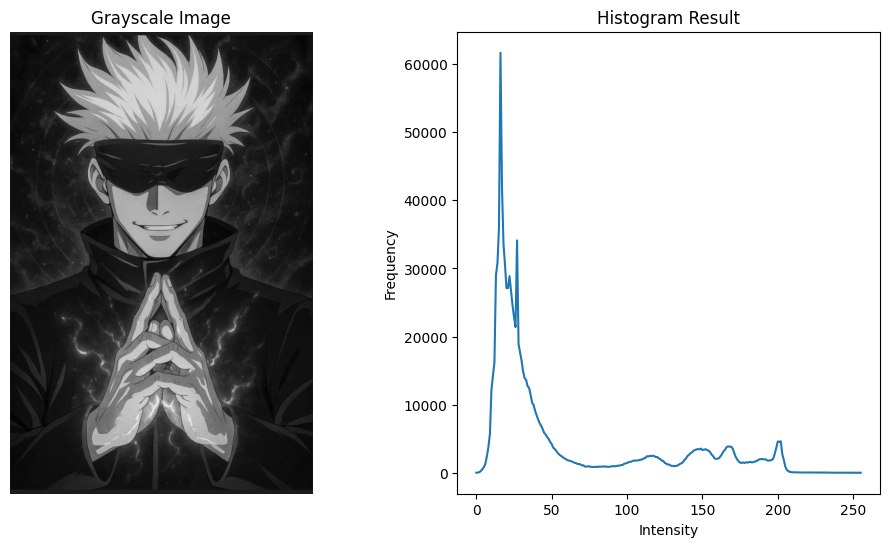

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
img1 = np.array(img)
gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
def gray_histogram(gray_img):
    hist = np.zeros(256, dtype=int)
    row, col = gray_img.shape
    for i in range(row):
        for j in range(col):
            index = int(gray_img[i, j])
            hist[index] += 1
    return hist
req = gray_histogram(gray)
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.plot(req)
plt.title("Histogram Result")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.show()


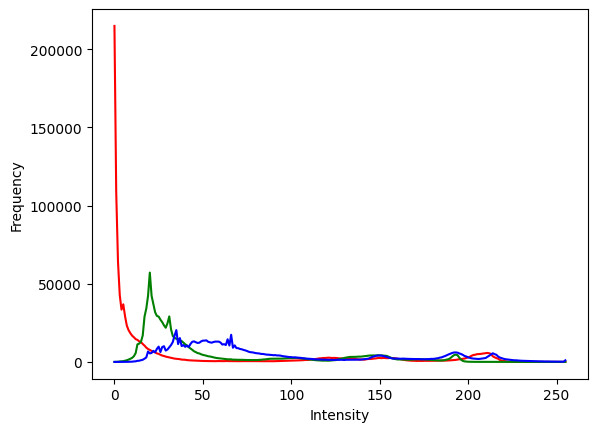

In [21]:
def RGB_histogram(img_RGB):
    red=img_RGB[:, :, 0]
    green=img_RGB[:, :,1]
    blue=img_RGB[:, :,2]
    r_1,r_2=red.shape
    g_1,g_2=green.shape
    b_1,b_2=blue.shape
    hist_r=np.zeros(256,dtype=int)
    hist_g=np.zeros(256,dtype=int)
    hist_b=np.zeros(256,dtype=int)
    for i in range(r_1):
        for j in range(r_2):
            index_r=red[i,j]
            hist_r[index_r]+=1
    for l in range(g_1):
        for m in range(g_2):
            index_g=green[l,m]
            hist_g[index_g]+=1
    for p in range(b_1):
        for q in range(b_2):
            index_b=blue[p,q]
            hist_b[index_b]+=1
    return (hist_r,hist_g,hist_b)
hist=RGB_histogram(img1)
colors=['r','g','b']
for u, col in enumerate(colors):
    plt.plot(hist[u],color=col)
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.show()
    

## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

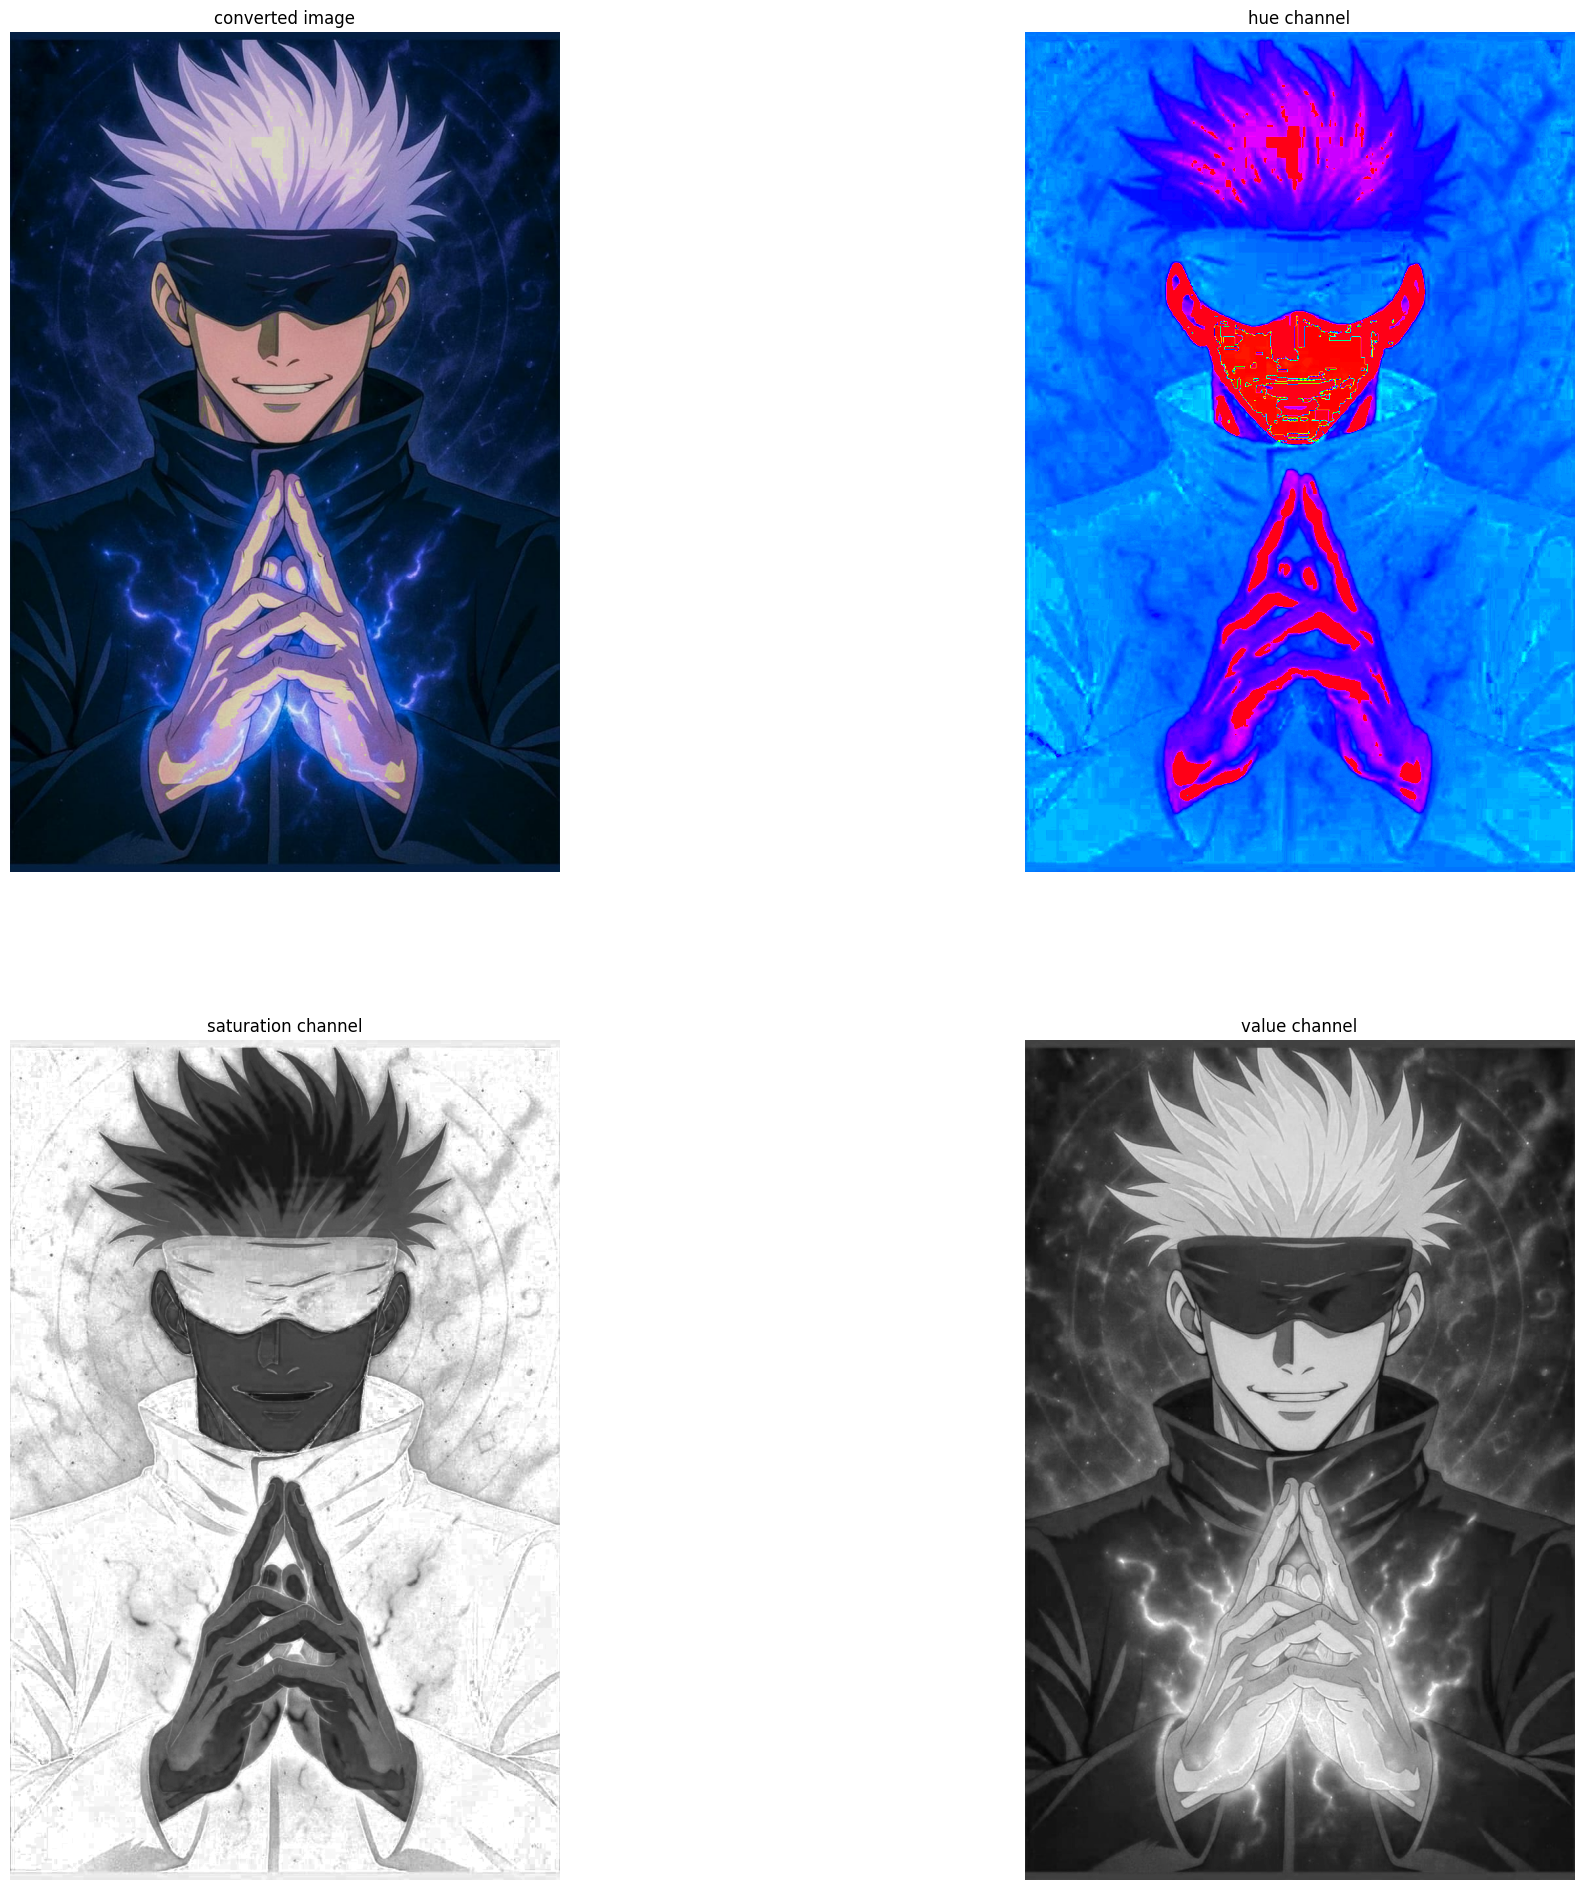

In [23]:
def rgb_to_hsv(img_rgb):
    red=img_rgb[:, :, 0].astype(float)
    green=img_rgb[:, :, 1].astype(float)
    blue=img_rgb[:, :, 2].astype(float)
    l,m=red.shape
    H=np.zeros((l,m,3),dtype=float)
    for i in range(l):
        for j in range(m):
            r=red[i,j]
            g=green[i,j]
            b=blue[i,j]
            max1=max(r,g,b)
            min1=min(r,g,b)
            diff=max1-min1
            H[i,j,2]=max1
            if max1==0:
                H[i,j,1]=0
            else :
                H[i,j,1]=(diff/max1)*255
            if diff==0 :
                H[i,j,0]=0.0
            elif g==max1:
                shift=(b-r)/diff
                H[i,j,0]=60+(shift)*30
            elif b==max1:
                shift=(r-g)/diff
                H[i,j,0]=120+(shift)*30
            elif r==max1:
                shift=(g-b)/diff
                if shift>0:
                    H[i,j,0]=(shift)*30
                else :
                    H[i,j,0]=180-(shift)*30
    return H

HSV_final=rgb_to_hsv(img1)
HSV_final=HSV_final.astype(np.uint8)
img_back=cv2.cvtColor(HSV_final,cv2.COLOR_HSV2RGB)
hue=HSV_final[:, :, 0]
saturation=HSV_final[:, :, 1]
value=HSV_final[:, :, 2]
plt.figure(figsize=(24,24))
plt.subplot(2,2,1)
plt.imshow(img_back)
plt.title("converted image")
plt.axis("off")
plt.subplot(2,2,2)
plt.imshow(hue,cmap='hsv',vmin=0, vmax=179)
plt.title("hue channel")
plt.axis("off")
plt.subplot(2,2,3)
plt.imshow(saturation,cmap='gray',vmin=0, vmax=255)
plt.title("saturation channel")
plt.axis("off")
plt.subplot(2,2,4)
plt.imshow(value,cmap='gray',vmin=0, vmax=255)
plt.title("value channel")
plt.axis("off")
plt.show()
            

## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

(np.float64(-0.5), np.float64(767.5), np.float64(511.5), np.float64(-0.5))

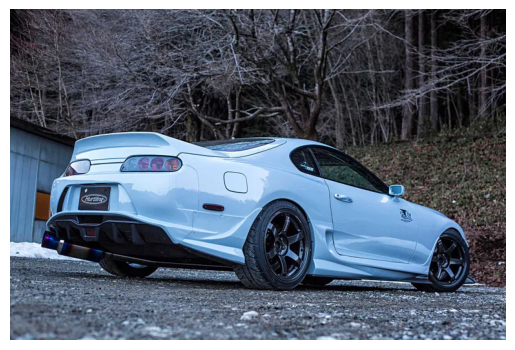

In [24]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """UklGRs6BAQBXRUJQVlA4IMKBAQBQiASdASoAAwACPm0qkEWkIqGisFWeAIANiWVqdQFDJQZ/Wb/AeStmjyEoDTC+j7JVP9tqtftzQ27mvqvKA+E+Rntc/8fre/sf/B9gb7gPc5/8v2q+An9//8Pqd/rf+9/bn3vPy599v+k9Qz+v/8frhPQk/cD1nv/p+8XxL/3v/1/uZ7bP//7OrTzfNv4b/ZfcH6H/lf0b+w/u3+X/Zj26/q7wXew/037c+on87/Kv+T/Iez7+O/9H+i8Wfz/92/8X+U/1vuEfm/9e/6P+J9Vz6r/5f77/j+APtX+p/+v+s/2vuEe8H3n/y/6X99P9l8HP4Hmt+2/7L2Bf69/mvUr/3eHp7h9IH2Ff4n/k//D7lPp0/2f/1/yvza96/7B/xv/x/wfgR/pP+U9PP////H4qfvb////V8RP7k//8poGQHqFkImT0SScbT1uxn4fjCAadp5Z4yA9ObXFLXQrYr174Ngew6qe3WydsCV9aAAJxXKr2LSjpZ4/8OHPtNrNZjZ9oMlhkVoDbFKiCqT7RvuiKNhzGPuU/REJMFSIOEfnLpJl1dJ+887T/Hh+DvDJvBfcgLdSPyHrfIt10HdVGD/2MXT9qQRDWW/XwD2cMxxUUhyH7OvX5rBRl3D+w7/lgjXk3XHryTXaNi+wngmnF6z4GzZ/2ivztiQevZdtV+WE6rQ+IuecX/G4/Kua2ukVS+/S44Xr1aOcwTHVooaJaZkgbe7OGz7e7kLEB9fJskOvK8qfe/jTcbyr7UaUE1pDX+w4YxvgJ3HF+x/I57TFX3V3x4u+UA3MCMtf8MpNVacSvH+ZuhGf8f7ghu8w105DxcYmiZ6FgwZ1zTCM+JDJn7Ji2yhvp/yEqyBo3PJIlqOC0puEPlGjrXXBr5NVf/P5T78xIguVXdVwEhNGeAaKlZEH1raCor7ToEQoklrIX/POSNsd3DWwDJLkPdAwHnYXV/iBwoK6d12isjV9eoH389AZ9KmZJseKtw4It72yrLfoog2/xS6VHelc5SZid0QsLg6EMqkdU9jPl533eNJ/ZyD7zcA5TjyaMEJviCx5XG0Z6KLzrjUwbWt2ULPkHgTdjkS8wZJF6LCKdUnxbpKwkNB9+ktMaiL7f8xxWHguHriqkEh0Sem07QDjrJvsBR26DhmMjmrrDHQB2XQToFo71dFZKFbGErWHwpbieGJMHkOl1nFUMcIrN8vrSygTj7am1DmUCEFo/NTSPkE27IFB7ZN9nrUmSsSfu+G3ocw0UNfAU6Z0hZwSPKeX714Du4RWroHBQ9c98OYzzxVKBqlg02jywM26zIMMmZ7ekIZBj0TkZE37zPz0RjnDtpSXUoiRPBAmFXku9NgrqEQOM0/XH4AiSiAyOeYhVhsF8ha+gdx3vC+K13mP+Dh9rRlTdkGggpc1byvWy5v4sLV3gKiAiYmwEUVcj7mJrDHRp7rnWWSjRtsUallJ2e4oszWAyw/uRv+LHVIShrBn+noRIJScCtYgn8NKO9bm7lLqd/reAXaSR6wGPeSdMy+E1Q+zEmE9fd28OJvOgzwHgGCAKP0g+r5ubI6QlsYl8OMVkNuLTs/wYhHiuWjYyA0/mtxOPOIVrJl5GYB2eJRfvT697AfMxmB6Y9FuqPWX/yx7lJO2M8BTuziTv0dRAwyiF8lJPvk7vvH24XoGTy+mfRutXwtJy6rRrkLO299jZxuql2leddwkzpIJn49y5U3X4Ha6uGwFtps6nTK7Ba1DCd4y/q4HBvvbCI1m09oj1oTEcG0yMEbWQftpugjIzLT4NethmaGrBddy6j+WgR1BWB0YmxIAh5F/CeAZJLIDq3myK6mMHwSu4ZEH3B0/8uw3wiyXY49+k8cME2/9mrt5fkA/DHtOb9uYl7w5ZHJN+rTqphCqo61Cz8U7hzXJYEVcp8sYQF5vu5FCt7rViVx0ckv4ZFDaebUSR8Fb0V0FEwywwwy/Gabq31rLHFFc1exFanORRXxGyHIUnO/8/z9TM5wfRVZFvDgbYNOhR/IBuxlKE9WIXTd1LQmLlkHAPdLufwzsFAB7bHdYliOeN5mZINT2wVWQMbfzk9pQn1cTLmk3ZOmxjWQMxwKcAkRRRLMGuoD8+P7q9HD1rIQTshHF/3zLZHLpYhQJ4IZsuG6CCopW/6AXCCHoFW55wkp09u0RFH/G3+kj0Nz9CysxEGJVrqd0dar/wuLRunmfDee2P795R32NKm0w/CNAmf3R7n2hwjTPIhysotoIpnq389xZZ3Zw9pxe5CBoZzNcM8X53HDlpl2v8C26Aw6V3AbyjgPZHnK03q4Mp48AeF9W58IPLnt3tdMM4b7VZLKPwLuEqU+UyWy57wpxuLHdws8wBbAPmDfcYZfrEX6LNvHnjQAE2fk/5of1Cpf+1f5H39OOxGYsoBTWqn7V0AE1eG4t7TBkJpqgJSog3NNOWcjdQ7zQDSFImoauIxa5HPYVcOO2YT179vZbWwy8k4HevfL1bCAznEp3S7FlFMChBPQJicWv/yCeHxoRYoG267x8pNtB3+r4KlFeBIag8BqKMcypN4Ja/xDqqGlgt1fZHoZtAUG+uqtecOrH0ZwJFIKgmHYznOQZEwHv2DvlcMJrPcESeGAzVm6p/9xhLcvoaUxc/jWul37CedNtKAP8TtJJfa6RIqNCz+55UkLGtuq5VMuVjrfs3DAgiuhYawcrO2XPUK6+X/J1w6b3GbatgCcSTB4mKWsFc8tNPsXdpAsnTndi69OV6HGDpVvO8ANIPBMEM1WwdRk4vyLCIqZWsASugsAoK0JsWAkIt60bYiy+zG66T9bzioCmf3u3fPwYnuw0MEsCuU74GTF2xiUEWrS7ejJsNod7j1/BPALZqNTRhDv2zecSohRfzBfeZ/c3GpX6f16F7e7p99V/W0hAftf4QGoL5Ge96OBq0nsbeiVPkpJjGxnIcKw9IOvdu6KcVDAMbbFaMs/XNpw037FLgM4U7k6s9+UN5W4FHywmakmI/dwREboZgnd4Cx8WAgZuL4zT55bRP35WTXDdF+/j2KhHrx9bYJg0kQAE6ZI/IIymHW8CEUNlwyCIjlWbwYMh5diNrz/db2zAPcK3YGkbQNkFx/uETmCrvZuKY3Vf/4fYi7U3Gd6mmVgTWmeGfCUyEfG9p4Be9Lnvyu02QEbYWEdNzzLZAfuaUPusYlSbXiLFnh6IRHRYOodkyD7dnG1MBR/3suXk+TlmpEwj9+8CVBJMyyMvMEgvi3RhLk0k/xr/dOBmdFXhCWcT5jxbkJSC855l/0ML22n/ZqawZJgrtMf5PHLX5mn5gKU+CTKDMSbt8FpufQRc37EFn5sKbd/nP1CrjiDalT7vyEAQwyxc+7sFf4boDso2qtkPgLov+wgfH1pchYPHJJhBfZfIVfWSiU46aRciDly/+FOeAmOeG0frUJX8GmTQvUH/w8gQvKHNX5VgogQV0BknXmyeFnA9ZOUGbde8ShLnYyLVu2Fzqx+NSFchnrgDpT078USDwXhzbo+r8cSdWd3PrYQyv51GSMDZouOyPjm7P10+iMhMnRvCaP341H8LVcVrIoiB1uSlXoWDMjuxsVNacTlrll58g/VJ6jStY0/V6cnQJO4il+yKe9jihM1nHewkVToFBzTrg66ydmBL9lA3EQN/XLcm+4Ew1gJt0uNF0bg3J7ExDm47asSsaEL+uza1GAtw/2MwDvp25GE9/3H/HgAdkQFKIoXHlqHOtRps1OZ9Gkg43U3nAqYgEdI3++hbVCsFrxy0M/ll6/Bwc8v2NLsQnbX2rPIBoZOs6pnSl8/230YbXklme77UfxA2QjSrbqofkxk2+KKf+7dJWX3XOUKS66OEJFoX/+4hXc9yQfozMSmZeI6hwSuZVXbrck6/csb27vTb5UQ9Uhv/HaimRRp5ahBy0/lbZsHVw57j/6e/lAEJBo2rbpTDD01Iuan8qNgMLxnPbCPR3dM1ALiTRqAsV+zR7mJ1tXj9iyj1Ii4VMiBM0zIO08NSJ76j2xVm081zNrfzpCOUbY0dsb2Z27tGMswacGroI2s+Nz6yBcYp1NfC4DIgO5SGW/tpej/fKre6rDhBrOPdtVBTQjne45i9y0FckZsYhCqokwucHrWUcL4c60NSOJb07BQw6865uAZaOiHGmZx/2sD+KmOnReExZLtKQO6tWeUs0vS3VNU50LGsMh/A31CHddvZ3rj7y10HXwhl1fPubkMQKNRyJq7qfGwjT9c5XEWAo5urPNstsZcHoLb9PfDU96tR5MTnbq9ee5Gsj/vAeBCSPcLWCX5vSB+3JDf4K1g320AAvBe1cLrC4a3+3/32L4o8jgxygWlX2xVh/BfTA46o2jiaHcuk1Bjr5fgLnESweIvyonX7XErThQs3sdfs3iMD4dd0lUNWzy8+a4V8Mh4aB4D/nSCjtBLMfw48Gj35Zy9ylsn9NkPxCq8Bi+gZ9ZLk6Ao7wwFR8W5AF5ptHY/hEnk42AU1aAJVssaiwvpRyCdhUEHhNp3PC+kYTCP08FdZvmksmVZGX9QYGpuyi4MsiJpCN+st9BSsNO9gK9ng90VZrqxfACaZzDPz3n+J492n6w+1oXTqxMuxxkaaUcY5fDF3NqEQ19jPNoxzAEl9WsvW6L2MaKtPUKV1UziHpYdNklxJXIqq14uSgGjwT8y18/vDYwV3tTNMcLqNdKZ5kDbvY1xaZUZPgTyqQxBiHOcYYGiB7C6mxOps4/w/u2jHGJVEMa3o4DLjSY6QBaHbB3GGmqr9xbBMqcEbsFlOJiiMvJzknsA+fVGjyAcyqOHgovMjIxc6euKjBW6r2whQ/6ybEhSrNwkPuHk1vxTpZyeJmh143hgLXiixEPn5PkmpSgya3btHKvVrNnh+Qnq/VkORYIzH5U9lmTbq/J4VOXfkKiIRQnEwxYEofZF1eJTPRuGH2lBcdRV3AHefJqnFCsNb4z2hMhQId2/zzNiHM7FIv0tDaN6XXGP6xNGtffTT5z3vesdLsNcI9o5oW/38hwUF9P5KNvqrcmWgjM5K83wNmzmgDJ4hJ16dLl2CnqcwuMSPSLwETUPz7gCGy62zjzFWtV6tqwzqi8nAPw6AML+3pMtlX9d8UzZnv/ibHbkdc9vWK0L6togW+Olu98xN8vef+vvNYNbO8pfOQcVx5HmZ7SaRiUsnD047vVRYV4YtSY13ddi7+HByyXr/y7nxRzLOKP13R1lMd8U9gCj6hZ/MEMSeP61KMKEXwPjse+4ey7+qWvS0cU6AB0BZEhJQWFZ8+ZiSwVZsAWOGOTAlkGihCtejqBTrzGluIxsTIowfgwMJRNYn95riYSMuBxuuQMBEWktvU3ZsmOa9NIvzN8jNoTtpSGWhHqJzRVyeNLFhuGrm4pQnxcHugcIZl495IWjHzgxzipnm3i3O/Z0FTQAAUav51NOOvQAgIN2I86h/vKZPRtec68UeOnvM7DSzt0SArG74G9N8BXiiaEpPmwDfhI7KsyzGd7QVC/HhEsom2o0tV35dg2bLo3uF4T4VbtoF4YNBRCPuXPPhbKletYr/8DfEpYtlMpOIx1oadiaIzy/5X43CTvGcJAFWPU1GYQ/LWn6xBzBE7u3zufyzyL30zCFNm68GBTfh9yOQftxNkdLSEkkQ028erTRC2/0ScXZSsk/ol39IOmx1Z1o3ypGZebEt1OhjdpOIOyZYOUDFBAtsLFTfciIpq5Y8eewyvndy8Kmoo4OOFxIA3hCnFdExlj/wDM1lJPFRYdy6ecA22Gum9od3mrP8nqXx5m/IUWy4B+wIAx++vb4y6Q1jZvJvnzVDNWuRrDGzf8gD6akGs3Xrz1F7ExvERStrsDS1m0d9orlg25DcMpBMejllu2B14s0UCw86kX5KqUTFfBukPXrzpfkwGpHZs270yv/Z5VpgRj8L588mIqllESLwMDYwZb6719CnzUGJxp/2dnUDiX8RqLaMnLZejrU/KhqKKx1wr9jhJJL4vSOph8ss5NNdYno+9KiIiOzAIMCf8JDCPG2fif++bNSmsG01fUHdEtNpDt4ToIpGHWAQLZBhONDyheSsjiHaTWoFU6+FUyqoyutik1m8D5IHYWlg2nRJ1eWHMpb8gSPPFg2XGPadXVc6NqyFY40m/WD4mjdJDMto4JtKvM7pXaLxHzVRaNvbfXb05OcPtZqs2d/0Oc19CRdxMleOM4+g0LkOBUoPCqW3Air2wSgxBM+CLy/MiNzu7Sa9o5fsPVxCvWHZlDO30O2enNiGKVybm79xH1yf9oBM4SNrXq8NvVEPmeLZL1zgzrvaREO0T+Nsusw5k/nxudKY6+ZCqNqwXPzAc4mP7kxKi5X0zHp8v+7w7cifnHEnakzt3l+26OjZQQURU8veeUK7l1NNYEtqQaq3423iqLwwJy6iovYVIOER8mZXQMwzj5x+jCKNQPsdezyQAKDSJhtSkgGxvZdbpxpw5jGn6zB0afFRZTonqse5j2kMW03OpAJmcgFgwXr4R92hQ0IexIhUf+0hm25yZXkRx57t1+IpBaYBRZaPvLZVtYNPJjWfNtot15iPsjlXLqcaChh8m8xvPWtqS1VCidQSYRnKHYczXFMjnaCs1QSSI0BuXtVavO4UdCRrEyc40dOIfSuqEAkmXXNVa7g7DA50MUXR6dsodPv0tF9EuSQ4zuNoxvu0Shq7/xBI73vwkbO/uvKPZ+XAv6zMHmwKocDiNSbqmf1KRQAElE5LF2LL/4dbVsLVdfsHquXfXJFSV/Neiv59t1Ch+0yTBqhacShCp4BzXpbLs85KtXRYX1qzlE+ONKpcIZItgoZj2dFsMIfkwiLSYvsmxczDpP+n6Asb80LaTplwxXITgLZ77x3X4jfOsxrt8MyvsbuRQ80kX+cI/owfLOB1G/qQozTWPe195GWRCTQf3AQB6sRlTuaNhgfPwLNiwGstlZMdWXIjeIqU9bvUQ+A+TfFlCSAZCUj3rFxsAQl7HMUzeVbjtTjf0kSuPMPC45fSEFOWJgpIuchWVqL8El/wpV3Cv0Axs+lE/JbeQKo0W2ss9nrbOBMn48QYMOB0gc5hALUvK5NkiBqRshRK0cNqnCquVJbkbYvHvHCvGZSNo9sJ0BYjBlkgyRmTtxJonM36zzgiloT4yStracqwk1iyvdJWAzebBspDUluiY+hl5tGxhwqfNPQ1/dvCeabVNCrd/7fjrnaxwfISg1H702wfHTaWfFv4pDYcsbK/Zl3ChYxY1cfZxCUuqj2IlUnn15wyQiZ5R3eN775W1JNSyCuYRZ8eZF+4MeIyQRmC5isSh5RzfP3lc0ISNlD09gDLZciuY0BZvnWL0LEotKJ7m3G/Ymo3arFydFR4HlrkmjzBKPJbcTc2QCXuXRP+O5gUYXhAsJT+Qcu6Ew7MJsoWumG/gEE8KHfhe8/WAjQPrNiVWd2nEerbgUS3DKp2ke+OBeYyj/p46pA9xtrIPCsWS4vTl2oK8qhNGGPGPWwW0TTjWS5VrQ3TVYmCv9VP23b64thZBf9d+QvuwhNW17hGa3yzSHYKgEQ9a7tMsuP2sMXK5P23yA0XREp/le/gIktgtpPIAUpedm8NjHSC+beFyXG+/2P3Qtu5FCZ3B3lFcHiqw40ZtFalCkMSNmFiLcde9b7p+s5AbLNcHv69FShSG3qvuMVnSoOQkBcBTCLAbfI8LxAadbLTTR6r/nucy2RjwwhePYZvf1Gl/AHQFce1ot9x314IBQS5uln6rRA688QhSn/cSMD8D9fy+hnctyI/056QTmOH6P5O38ndscnLvPsh7efcO6SkQreEOXfHUZpfwJxA9KmywOd5yWNxWE5A78whzPqYYFayK35TghSWrWcecY0EFfl9LUa9IiVaA0A1r5FgNXu0q+lY+S/TZQGWH9DnrDD6NsKYoPb3eMCJ3R5rBVPK2PTH/vGLe4/F+DU0DFALdRQBcjg1wecAqwL+zd0NdyMnDfyL6YKDGxH6tg3TQrGIusV+l5Pj8fAe2iXTG64Ti5Fly292/36RT0/jfqvkOg99TZtSlS+bLxIgqdeqTkq9lRn+ONKTqsorZFA61j3vG9odR0dpYomMAqf8EAqI7lawbJLOYPVlVWmrC+XvU5FxtMsnAhj2FzIBGr/jrZ3Py17gWU9SI+aE/DWSTDp3O0N0KkagHb9aYjgIEqtx3mV2vNFVvOpH/Bm4IXjIseewIe19YJ8R2+5x2u4f4w9In9r1xpPOWWTpznLdFY/449nCzO7JinSqfqfi6s26wQ4kbh/omgVL1CkeFT3GeRbbPkSyWB9FhdA3HlrbSpBJl/YLlYdG8KYIGzuh4tTGPFNi1n1CRhykL36mzIiFZA/S6fG5SOTycu5KgpZeN9iwB9oc6jQsmPvpOrJ+tsKk9Iq8lBuloePyFbCY+M9tMCh6CupsJmN0GQvhTywxk7/oQg6QpHZboSO8pRt50odnoIyHDzr/+Aq0qsXzcgaOiXAqrbHTVEtOa+sGXWEINFenRNUkpy58jsWzQxSmzz/NAKYs1cDg9BeNiN1xqrP1UYydknjSukPzK14GVmGf+7g4PML2neo49025Lf1fbWJ5aWdUYAdqAlOlEI9fcmtOzdfmupWE3q8eARJP+m/C28yNLWcQie+bikVnMqU0AK5Ho/lXWkRGjUVoOhgU+GneJEJMRccyL1H4WG0v6MFcN5ACja5bUzvDv+JeLHgT4MRnwPWzsthL48yspu4FmXi40UIeCs5GsSDqpqCFQXrw44TgQp3+JIO3L5IXnU7bIhIkz0JrxbUm75MJGI51LnAdz036OGVeIilAL5QKnDa8wTDM8+3PmToiRih8enZN/GNwWwDjCW19uTYkxPTY+N9mBIKNX63dI9v7UzmliU/6YDzLxjMJlirIm8C2kOZ385nlue8qZSLvJFNNLq7f1evucp5dcP7fLAzkArI8/1XaadHN88V1GpqJ5EOvSoUw0PpbzNkZVE072KZ5e9tlKxw7BC8QZTuK2J6qeOExVMmFJJ3kmgcee8IE10Qe24/A0BD7b2cUabL3GLdngnzBjvLBOzWN+rS5ZTfij4Jak4aBPqa2GvKi/ayYbyuQc96GkE2ki8kgTBKsGSjraJ35PftS7Gp0CQfL7CR3juobt5C1IeSdx34dJOuLT5i2JUJsfXyiS1LE9djs7GoV3ueD93Z1R0+Eli/UT1/kPfNvqlI1gF5fUZPXAnoTy2YfxtQp8wbVfXTXdCnb/nYxFQQ+yu9H//+1cQi3X+XpxDOundQvLkeKNem3KQn5KR2pber8E5Wy6FTt9bybpH2xszN6PvvpJ+oqOXkHOghTvGzVwlLfU/Ty3QlMl4v9c31zg7YakQ657nflX7UT1qMopC1bXKtG9rUwynVIhXgR5x3Q3y0TelWVpqVEIm1F34/b0yxaC+bsf03r53BiKK5Is8C/k27EW2RLX3U33rUU5TGcEfcIj2aXUowlOPB04Abce5pgsYh6CAQ+1IXgfWT2QHqdpc4ZJXM5xIefVz9Q9vqH/iK6aHbltknR/X3UZByNs4wHAH6VPOhuMEKBATeJJIDdpVWsCxAXdc4SSjzA6pz/uYmcY0nDNqzkrjXjAQmu6DzIqMVkumSmFzb96DmSktWA3j6RNin6vKWqLX0FFIr8GNb1SHR55x53U8iZgjP6voM3T/tm+20N8fptNGbG/PVE5N/HfTwR+q09dC1VGitNoVhnlrlo6tcF8DmBk/5Vu5uv661NviVWaieJJ4PyE2+LbMJ3muK5H7jUSoFhh+DYldb/1sjPvueotzbCGa+bGOTewReF9+TzSx8pHsSYRzzMnZoTMVm9G0MDnK4x0pSXr30t5NaB4mGQBtOytAFahk7NbyZ5KTcZRLko9oU4S3FVpqQz2ZKt9uXd9iULkEAYRFkFYfbUlm/GNAEyJJHGaGOlt/Y0r79eDL95CqL0yE4NOvCmhkDutdg7t+mFxIjK9NwEMMTKwDEa5sTP7s5BuuC5OXy/Pt4HinKgSn19SzWvJUJJPmV24prEgAK0mokL1s+u17byyLBMNxcHXuk+ijuds/O5YD11OjZVB939RPBOf4ApZY5J3j9pPcfPbxLO4d3R/fodylhadpSfrzQHdRgeywbf/An/jdcduQsaHe/gWgzJZ1xdZA0z3ps9o7B7vErDEhIXyWfJ2j+nmQz6IN5cevufBWO7CHKWRu4JI3FcaGsq5JHcYKXfAybAnso30Xq7D99YBE+v6kJgbQHmqWeaO/5m9SGJrf3guMtT8Ix5N7Y/vkbuVOXTjtA+v0BE2v2DZ0qzcMCYDMNeH1uE/yNUw3GBIkIR/JK0m5d8px1FTCka49OEqc4phiwvrT25wTJ2Li8b7M04D1Zcbx6w5ukNOROqiVMY9S0oJmHEWJwxOOvycNKmXoIwZqfXCIagY3J9L3D5fd/MEbAEV+x9uzx588ag9ZrAF5UR7tluiVyic7iZPzlBHK4h9W3Kt/Puzoh0jKSMGxK99djMVxfxAby3dhjDTxIaYgg9AxqGQOnQrfadba0yKR5URMK8h6ubg9+WnMmlFycEgAk49EZ9bolzjcVVcGlZvWJA7GCHL3xOQwc8pmZj59Pt0LhqFlpfLyhHDJcLKywV+9iDXGHXPNvEe5crfR7rkDz2TG9gGTb/FP54Cq8ECLUn4F35IZS388KgxUAXQ4w1fWdNg+bu+Rl3/Q+9lCjNdsRgAbM6VSyMDbG7zyiTflg0yg7W1Y6pnnWu9i4s/yX/ZQS7nGICafir/bf5m6Nck0CTjAsH1LORk6Q74xStWkW59TvawFrtNcLqt7MBHqOhtcKj9UeTi8YiUdvFml5m1u7F0l5ES7nyVQbAv2FVKP+j5AajfxreGYgRms2GASWNrx7V+5eyiTlQH+yyj4Fzb9KEaf6af9C/UY80hd6R1pTbXk/zALcd7wBFclW0ItFTpxkaiNZmPqBrHoMR6SNp/UQYvcPNUc0jxgPlXHLiaJqhAjIuHHER3PE8n/4yWxNL7xsGzltp5JiwX+Uzo74uZ7M5zWA+EM/+vCa+aYaJwGugvD4e3qiG65idJCLwI6/g9KLW2YTBGeJmIgODHgSYFrvsjXmbdfUtfhNtDBJCV96RsHZkgaw7WaxGNLHd3hICcAWgywSFld/QanIdEtgXu+d8WntpTx7+6m9DLJ62L5xkY9XquqeWdJ2dSWsBYwUtXF6MNmRNYcJcFUubbo5FEGVy329Pg6J2x24cKKrvTGZpQGCGxhQDGsIXu6Jkb6QDIUyiY+pxf9x+RKZELvNVTW9b/BY4X770skBPrUOcjrOT6cU/P7HA4wyBCe9Wy3UuBx+RoiBNhRy0dME3m3/Sex5hB0Z+meu6UD1Fo0jmsLyxE+KhZ3GPqfYKHywLeKNpn0LrgCKG5e1fDa1eiZG5Xxe+lKEKRm36fHyGsQueSJV7eEIV1pPWh9pTZrmPKNqrJRREtf6nylsgnHwxQsj1xPvxT4A41BhNJ7Kfs+iaX5VfOFsXjFNOcECcAwQRb7vet3oEzFs4ozu5Q1E18g85RT5gVaHu0rrEbZKGBMcDRL3de8p+2B/xlyAZujPCYeatrKIkQGUXLihBn+y+/Q/lM6S2hfozR9cuIEsUJRwZ0gWt4Zl6wgtu1QQu1VJeuUS67SW4cFIe8tIDxTFAGKZDhWCkHEre71z9XD5PdjGRuM0IHnTzN8zzuTftWTsMp8CCaHpR2eBhshPudKP5cf0zi7YZojG6qVfOhX/ANKC9K/FcqlLRVw2Pk9SN+0am8EuDGERRXJUDiHc6GWhW6nvt+Zx24Sx2uD1f81/Wc5gjQiUD4Fn6dKRJwNtPIgMsAPvJ9NVz7ll+vQjy4ggIZPDWbRjnq2RghIQ/Sp4wMXswdC5zKlKh5/q72qNPmrpuxwzMQj7ngLqS/NheOXvARZ+G8Xvwzjf3Lmkxyf8hFnjhdalLjZLx7m9pFeu5tl2r9eH6zr99Y9ZLK1CI7K7n8iHOWhw7INGveN28dGGus7JcBoJpWm0LSOEwIBh/0pwJRmfDVh1fQzMNMVEC4CIRvI/WtIsF84vqxTqcy3hrHyH0BxmUdvF2GwntX3uYpvCcVG0E9w6EHzNhP8bdi2ZQ6ZHULEtUiAE9adcc+1QraWDpmh+UrFuB8Tn86VCHXlARsgi/NM/+0mbGMXr0TL67D2nPIfTYtyz5MYQ7HnZJu7yQMafJXkP3SnZtwfznmkaFZinAHcCxhhl/SODklG+LKHTVrXfqY+me19UnUoCDtSRNaIJH26knHjKUHt9epFx80/IqYDP9W1tUQA+9KNpelnwH+0kiqDpaWwarR3gte9OuJqKhFtEyjR+qFivIMiLqT443lVwoQFXbe0meaBXr64myKBPO6ACgyLtaROv7+PGfq8V/Jiesx3nuIeDIH14DEuAAA/v7i/oebg0O9N+3Qn2Xu9Gn3XoHEA3/gDf3Pel/aoBuoX3RWbQAbZgAibHdkXGypnq1n9uwWeuXXI5xO69o8LailMru86VxJ0XzXUcAfJ9Vh/oo/rr1PdO2JzC9l98uPqAszAsaJFcquGM4P7Kr8DXTUHPDp/xh6v750Fluo8QJ3Ckf6bxYpW+qBEWbSjCRwPYffgzZFRJGSuQHZO2f6Wq1H6EYMYDHU3By3p5l3w6o4EbcwcJ7m1xa9l+PnlOAcYg6ThaLaBqnu6yieD/dHMzIWna4IuFbr59Dab9SMCs96lkdFC8Gi9fXgpP72ATVLWaivEN8XXq7NBlp3P4NfW4D5ZZTt+ClYCjJZQVC9C/7t6Ud2o7jZ/NWy95UNeAU4S+yW9jxDAe85oiK6VjClg3qmRMH0x62p6GOL547qdo5N9tASRWJzjeK/5UL3eTK02Xwb7SCO2rMOyMjIG6+4N8hoGxlrjpQ7LcmfchZicktUhWg2jc9kJ9eg7taJYtNGAD33/cChEBogKKl9UhOcpOtQto9iFt/bOZLX/Ym5stsk/VvcAF8q3T/jE173j95ga0LHIjOhZFDwIxVV6pchkFsPeAaTtcvU7F4+f0zuiXzkGCnphHIYdOwr4TULO4+UemkEPERHuEFhzl/wma/lDImCeE0avKw8Vtu8Xxt/gjaX4IsW7PgOeyUNtCI+lukjcDmU/lyIYs+P3kNqn4eAYCk5Im66V3hJoO9M+dHsIYZbynkSveu8PHGEWhY4cz+mHXtHHVyeB5+X7fL61WLiayaa3CQzAKCt+F9/RYbeDB6reO4MleZCIuS9hFaronkv6zAUDHERR8/3q/YoqAvZvy9SArlHLcM4xIiyAdh1lIwEIX6F0KPTv2xn67I7uI0qm62/hxOmIXyL94rZRRfeRpi+CEF4jvDVrN17KiI5G8fTZ/SwoGR65ctswxzR/KiJre6F70QSdS2Njt2SDPPB24rIkZgkf0WpAE4lfVcM7n+RmSYrEDkqM9a9D8XqlkA6gUizGCAqZbBnsnam2+z2IA2dmmudziIjHjHHix5vbNX2McKt2Ls1k2zVpfnpaQb80qxs9afB7rYR2exXFt6C1mjw2ApXw7jX6vgw3RuJ7Jy/sUTwVqi3q/8aaH8ForrcYLnNODq6pYe1rBHQE/5Zh/AQTSbTHRMWTnrU07Fk5VCdm20h/JWa6gu9ggt16rbeR2LrNZ4U2TnC1KRJWFRXt7H9CfQIsAtXlIN3Y4CjgAyGF5mEh4rfYJcSd294RQJfXcjnv7wz3SKDUKMd89MSR3bYkGaRGCiVaPC00G7Ac49i9GI2E7rY3fH1b39OqnAHluYsTXvxsB/OBx+LibbkpOcBH8c7SNVOb0Wyy3rAsuuVhPMWS1h0ywrmgLoe2v4T5dEpcD1ejubW+ecTS9BLXZ2EzyU51c7WL2koX1zywGP3+fFxyS0Ei9sbNxGplGt+rdapfgDhPkNm7PJgXkjwaw+hmAS9laixgmSh/dHW3kPGKE6M0tDebEp0dtMxrGCqEUqT+IWadMxHED+LRA5AzU07sYfioJKIqJ/zp51L+lJVqKjpwY7QaMuBW87GXrxiX6WBVM0X9PWMFBvsCqh/oh4S+jEn7da54yoU9s98XOLHywQP/WUDVt33r36ewqgSWggRmcER+ztLnBWjaSBDL1PF25qvEdlmTMvnE+4p7Ap+jwrf5sEfiL5B1aja4/iTEwBaWYRPYgUEBJREjF9hJ35bvaDz9+odNtNYseLOG4PZK90fMMxeNLOzuJXu50HbnVIt9Zf4R0zW29I5w18LGitsFyZ/YfvIZe/s9SlI2lG+MFpwWLpvRfWmavjiFrlTdh6YXN1qHvsuSFX8jvS6LXXxER6sswApeF8uRmeIE47317bcnINWuvzr9TFsZx61hvRlQ3E9krQfbf648eZLD92ck5tpyvg41hnT5+2LrThR2fiAw4pne8ElXE1y/207Thbcj+Jbj11HPxKqK5E2fGru6u0QSCIOTd8JfOp2CCJhO9HQBLr7YcbFWU6ClJ9jZIT7hQ3ECkh8Rt5dIH22tVNdKvlHNne8BVjXh0sZt7rcu5087Hf4/g7kMsGITYB/xkGQMK/HqEalvKox6C9qRuYwSyB/3FPFg6n7gd9BYsVtiEe/zPZ30UzahEz9oyXO41Ne98hAqjP6Z7wQtNdFysyrIYtyLIxySyMi+MGhHDhCWEIWyQJLQjJj/EtPIKxbZ/YrQfxZ6E4UR6atrLx7raXmdCwDt0NqpvlE0DK7QqLx2juFhKr+Qx52AmFkSyGSh+zrllkPl2Zrq49bOyKzqgo/QRPeO/dqw5qR2s508IQ7vFhI4dOqQfFJ6XhGsq+TvIxVzHXukcnPjkEUNipc6u4cJu3vDqZYmdK8TFHwJ+jaCe+Qbx6uqMNcxvOFC30QkRwvmOfTB8e/W8uP99S7+LbP63wmDNW7mbb16bNZuDseujRa997BvKNi+yKR8+1yvWots8qj58greu/U7qTQRJzvSrvJbuxNYWLu8L/XOo2Mgr7lmnRlmIV4xBtlnfzs2dilxWsqnZ0WJLmjqpDnCWVSbnr4pYs0N5EkXDovncM3BGTvWHdw0gOeW+THRFQa1Uv2eJpxdSv3YDefKQuM6WWQtG0ME0wHg0nOexpDYoEMSyXqkK+qPKV+6e6nwSPlZzO1K10/4gLdfyBzPLCBaG89Sk6hrX34z5qbukvE0lQWcx2OIZvQrCm1bnWddsDsNuTW/uh+9qAbXsJqnKd9sztTapUCO/WUArcmnDhrafVUhAxECE8s75G69tL4IjZIS2YiXkqO8mkPwaFcBPcJQODNrMJp7rrCFM+YywuUgzMLxdlOIDBSs/WhSKLw5jEW3DcLPRgQJC1zwAVxkb2QLGJF953TF3NsrNuE3oTvtT00FMsOPaEmWdBURqO+tDXWgqQkoX1B8dYOwLHvqPtMlptSM5e2XKWI56dHbRaq4N4SKygwgf5FbvjSTD8CmEUd2WU3LHhYV2xEDbq1MkdZM+q41BEL1xMoaqgPbKTnpnKL/tIwo9TOSd+sMnSR+xYcwIqMQftsib/yqmWA8v+enILIBCOErpm0mlP8hb5K3HDKW4ltDVooomFsBhHERuB7bqGcTb2LD9sYDvw/cworo731hP1o127fLplg56jP1WtK1Sq7mcZd0IgbLoxehnGDTyiz1o6XG8fSaAJb5GaVkTiXEnZIQFZrCRUdZI+kvoGgWcHfyCQoMEFjskLA/CufCtKi0rvRWAyZBv1yCy9Z9/K6bJqZuhfaVjNwAKO7IRZ6nqwSqXGlt2aD/bJk6bd+LnyDvlQTj5GPLbKeop0pfg/M3dfSIGxyeuNyoU1orKgiLmGesBCehn2X1Zg55Yi8qwEusq3BRMB0zcuB2MYwpXDvOjgBjg0+yRCpQuy4rssef400AmLn902ySwdbFV2r49FJfJu//W7t+/DrfPZ0VVoijnc8VONYegsrB9gnKaoudQ+yYdrT/EKg6ZE6BOTia2qug0ZUv9VbcdIPW+dz59V8+7FHhvfnN1wLcclp+TnjPmLgsO+w+5cV6JHW9E2PYl1cY0sTIez53VnoXgTW41ermA7RduqviFrlsW4S6w3k9UsUO+ddT0J2sZwAe0IUhK5hHNvR6J7pmWL2OPLoxFmlklCXlypHoYYTRQ/AvwkLJ1n1y+3dbsThUt1mmM4sBD8ZdNn42rn6Y5XYpnLyetTS/nBZrHMEmgTAP8dJ/Re3/83G7o4Zpts1ICVx/VMlhAvvg8MnT20NzPqNa9AR9Y68WxKDmPDzHM/6NEW0vLwMP1OhlQJB0FSrJ6YuD/yHrFlla+2zM68HHKAa2a6iQJW/fsUciqTAABJeAtOCV5SsbqnsJyQHDs5e873wD4tvgcX2xS2rF2nJ1dvM7F9ZLEJB5Nlne2Ki+zBzKYv7wDWcyH2h59xaPfsL92+NqNB3xHzA0zDWaIQQP9a7W6At68vF+lt9dp78GjMGyX/pNa0pOAzveNuKFlhU50lH/AvawbdBzfYtvNIl4InzaHlBoSPqr7HtuSDKSDY/8KSZpmkA/wY9Gt6Y21/X3PHYmCAe/1skA9F5T8udIu8B9bPgufSIzG0t2Mz/r79VkS4e2A/VPJhL0D1AC4gpU50CCvtn0AG0BPvZCh0nD8X1oYMTAYIhxZbY2fhkTJm2dbekVpalTXoui6acBkxVOWUG2Z8L5RV6giBK7PajDdJo3LTcyycB2UGpDG38ZV+ltoRFj9Z2ZxFIgtt4OPLCiy60Qrwazflq584HSx6buRc1pXZ7Z34aembEx8XBP6VjCtcIDAibv+lvJjMkpGl9Iu1UcvPxen9Gygv7Na3hzWy7iuqx+oz39pqJuNpSEd0q0u5G0j929vtlmhXqNylROrUyce1/z8Kbzcko31hgvp6m70LeEu003RL8MXjeSqZ8Mo3vg+qT1DDyZAtf1nRtDX9qauGlrUGvp36QgHK6AayFBiZfcOzRZN/QBsByXhy3sgPQ7b6KpdecXsyzFDcebOisY46YuBHYOXYxDfj215e4vUOoyxrLhhDzVKXbUrWMzM7u07HyN87lwhaM9w/UydjBsERVmF7gQJusZZJSRZHJR0rGzkQSBvvgPSgqb7J1skUquFIMwXnzM9ILBTTHUk61nYvhRQhq69y8grJILhDi5mExQtcHwCbRz0rydoY6g5Byd8JD5KnQ45ae0ZFcowe83D6cz4vpbQ7Yrbk33eLnStLIQCeYozQrjmee1q6PXOszfRlkURDEuL7SVWCAa54gIlphS8ePhqcjoHcsF2BjCydGMyuMeihZYWAGdEa+HvDVE13p3/VIfhLKjS22T4Xocts1IXSi8qVnvNdaab8CVxutYiNy89MHO4p4M9mbcaPplx9EdDbVtM8WvB3+qKo51pEtF3lXam5ZudnYKFXOLH4+3TG32OIWuXafVYKhCvKNIWKgr/yP1/jNi0kM2iHZTAxqoJUXil4fh1QuQBXlVtnPrXjHrag788+nStuX+Q1uV0rkao9YtpmjoppWTaebzNSIdqS85kIXCoGSfsmE37x4wENnDvVtzOAQqGYsRLXm1FGDTWyMH/xOEaZX252cqPllW39c2Wwbp92rDBDPfo1mdm5EUFihzwm+GVWiop0Tlug8HX19tyQ2mw1F3JqnLkeCbh+7XXxJGMkv/jAJWI39iY7j+CkP5mRNptAVjdLbWRg3145UK5O6/T47ufhUFDhzbsG/oPBdtBemAXgfkDe4ig8RllJnwodG8OKvF3M0unkAWeR2pZKsItlON0ZISy6NYRrgCRU7xkPt3ceYKPcGyJGtn6znnrIYHAgydbEN+/hiO7MWRZblP1Lh1A+C9P+AnMsvLvvz18KS7hYges/Hp+TSfnV5UiDwfL4Lf4u1He0EvVcpS02oy4FblQkbM7rVR4XgaebcWABuxYGoPp3vgrjDsLPx6j88gwUdYxvtPG7iUOn8kk3UDgloJDvXUZm8qnMM8g/w0PtmbQoCZXNNxYIMaDkNsWS9z13kgtDZRNxVtBZWV+ZFU+yoc8CTF3l8Q9nKu2H3InswsMYL9/u16goXbPg86AO5S4+Web/aKuBBsnpV23W3YqDLVO4devA3DIcmur183KI+wn/MjEIFbI1hINyJZFS7aCtqiOL3yhjeapFbvw9ZCJqZTqPWvFSn+GSSnUaR0r3p7BPuFKV0Wi+SrEX2abyceWkIb3ZP2zNiw8Psf/K9gJ0AsQg8aEHdhr6K2/FZQyyn1poFmG0wslONgJdL1JpDQ0h2WzwdqfyaGeLBWuqyg82riTuPtqnW9cJfzbfHtBEt/zPGxmD5DN2rB9h5bNCjV47kSkT40xfrElHerP6FLc38QAqHvDoVf+RInSESZhBOqbGUlMErpLzK9PgxrlZ5gKmoN5cBOzgxUpBWh5sv7BtlFh29NhW6xi69NPfcSRfzzPXmhadeof+ax6yY7CKen66dYy0dH4UVysMTgugvldVA32ENCMS5/INSnviCEcBzqyqO5fX06gKkOlYxyZk6g9Au/5HNpRjyYNclLNPc16rfWVnEkP/CZdPl8wr2VQvWsIKGRaNorJZaqjofKi06H9yrQhXEBi0T9oK6VuyXt8ihpX3dvbqXnTOXVYCbr+GMPWkC3q56l3IWjZPDj78QuXDhGWG12gtPZLA15jDLlw9weHDIOhXYIEICQmChoB1IKWCWRlgWUwdhGKyKeP1ZuQlGNBBRRpCBT0FCQIltVq+4xUjT+g+XwGl4ho6asA6Wlob7KiQNP+bFvMooDCIib+S9cmvEda0eDoYV4EpgkISrLpdSrJ4JdlRBRofCNF7LWjwRNhE89WYI+7rx4XCtAnk87s1mw5Bp5KQhNwvOUVbCklIIwhzzUs3213AJT3AE21c/8CXhQeP2DHG2nGnFqlFXbNKXTMwwdMwTCqdubQPjzhuoAJENXPgVE0gxRjxIP+x93PpbUIOkNf2z0J9zB0PqZrJHSHrRq9l2zGIwUOyTQMYbUiG/PsGk3CtAvrpK4DKIMejdz6tddfO4ohIlI80qn8e/9cgBtd0QyWabH4COeyal+jHOa0EpuiprIdJsIwEsujCPQ/SX5e902yE4omRUlPKbBCKTcnZqRNKtK3MdmSfjKO1Ynb8EaLYtkG+8JPvO6q+Z1RK+kyj5kLo14Qr6qi9agZsBwPBE8//Ud/XqGjee/uQXbS5v1vOw2gqOoqUuFbcNJD8OALQV8cJNg1JVuYYJowyUmYD+rB/WzS3VzJRWCTYXbyJ2Ks+5zIwZa9WDpvF9Wz+RxJYLFImLZRtp5taRelh/NIeINiZWxmH0m1VHAjSOSFd9D5b/yA6mZ4bcoJm3ICQeDeH+Fq3DEsV+6ui+uzt8kmbbqSWlxnvetLFnx13uWHSsWMNnmYcGIgGdzxdfqkyVQfQU8EbNaBBGTc1DDlWvCGElsqtSea+T4RAIACR5Aul5filQai4F8cJJYsYg/3gLobaaO7T845qqpeF3qEcFWZf17EwoI/jHmlZB6ZLEmesM+V75UlEs16+my2fuw2r3g19X4EAzkbSzhe6Q9YLqus5JRLUXCVd4EqpZvHkxe3W0H3+inLuZUKceZPJl+69wLhq2YCSN98/RmHeDCk0s3f8RklgUSBMWpPJ3uNYBm0l4oDADaGj26DAXVAU0uqTlpbpvSvCYmjGhngzm+9jCQFKmsJr4NNSCgCLoAZxSaPG+bPEd6MlEcm2eAt9pNgTBfX4stQZLf8u2WbLhmkYvNehg/SsJJ2v3hcaiwfx8Fv1kpTJ3J9KH443owry+yHmVZCcW3l1Ywi5LZ3Jo3JhQ76+71hYdulhbjCvCNJLELTqB3IZUV3q6oFfAqpj7NnL42Yfo3bzIG2DMwE/Y1+yss4kfjlmOGHk6lqHQUws6nE6JWoaMJ/5d7xtKSCy3JO8eY50luJhonHMozkAGza1YnQIdVi+NqCLPjLGu3AFhw5madS0N87Y1szYcGaGdGibUYdyPwbN3LAhCTyBT341sYIPWlM6euQXQDZfC10iMjjhAENR/po/q0Z3bWesFDmv8Rc3PZM5BKUb/3ixaBotLLEK5aQjWvA6DGTKklkZ/nCf27rOgIUXMo3LjEH9PX2SM3wULdiDxQdfnxCXkmfmCajUX89m21pzQ8QDR/Z0qJhVQc2SJKC35vytVdi16RTYHO3lC7bKvSFp93/QuCu4kSxpqFu5HpceAEX3GEvebRr0DXZwZZIWFiuC8wMcPriyQDrVRxG0MMw4c79pIN43UUm1sW6WLWAxo+vXfWIBdyuEEnnDuHOnZ4N8EC43N+NXdkSdy76hYyKjvviqhImvRJFIayeOu8wUCoN86tuiqfjECkrfiM7Obh4N66wi0eVYsI5AqqeUtn1MHT2ACsZXR+PGJQeISHqFHiDpnC/mkmQlblGbnr3QhQGiwzApR9q8+ycf3gpBizT5YaR3emLJSqvByymsnLXOuZra6wJpsP7nbMKYY93IQDBuV3Z5qFGBIJ7bIL//SmDMwmntg1j/9KLuDij1iNbB8DdIA3bS8lsph08Htmmf84daE5P+hBzpLHwTlNN7YN6q+Mlr7nOYnmw/G8abZaO6/2j8LQRTL5rLHQSEyEuo9Cb1CWfI/9406oay+1ktkcoyZXD4KLwy3dt5XrJ9s5jDiIxxINI9XmOvxostfu4LsQxMilPASZz0RURSEldMYndhqo/sxdx/hDQJcf3D4aYMbBcaGa/mtR/qUGK+NBtHXhprW3FCJDFqJJm17pVbVl9Yhve/ABYHrhoDM/wA0yAadNQBs/9LudIC+C/n1aRuKvMUcP7hzQmnwlOkFiGELKNXLM3H75wY2WC0zrXY6Nw2ViB7rcuRQ+1FAeNSR/neEqwAcGr/WJoVgh+PtMnKW76FhFaIxvWVrK1ugBVD46qaUMn85SvzajadLupkTk05PK7utEtPrc7mW5hnZoBwUottGTjh3bOujCmuVZ4xEjuIByaukeYcCgfdGXUnV+0kM6zCL43gfMstTGrWoR12GsFYEUcFxeMHQeVJUHmsUWSzKhUTDSWlS21t8fGWDUZjpI2FIFJTTO2UrbIse9eAc4DxDVoLOmJeVX5s2Ns5uQkQHxeBXmKstKrkpwGi9A8NMhxYTyr999O1dpuqJgD76eH3gABpJHjSUhZ7FisgM0dn6SpO9h9kPXooSv5A++0VVgAWcLwMiEMuQzZfOBsoQ8W4kBH5un2AkoK5Fk24iyZ0OF6GM5MeBBVtvEgW8g2FYjKrFgw+cmiO5pLQL9ZzHtS8HKbEtFsvzLQ5ss9UqRnx9IiMsXj2mXfNZjrCzuy1sfmx/3rLL3j7Wzuj/Ud+ds7VXOJMtNj3DxjBPk6wSr/nU+mJaoCDJBUe+whlgJa8OjrOc34rkT1XophOj9d0kwqSBX8NjpIfzYJKTA7LA9jF5MwYGOWQTdZWR/58/Ne+7guRKS//wwjy+DSDPKxsdcwQUwXG9u9k6whQ72IL9cooH5A91we2VMtXoxEinj1fyPnF2p1jpMa7ZXvdECQ9VZL9Si+arRlCGXyBSczds2k++1CSHTw4fCtQ4mIi5EYt1GXoljiQbUrugVZTXSD8EjDEqBvNTcBrJAixAwLnatMQpxLk4RM8WkMezBzoEBzDGv+VGHE2VOU/oDEpkGJ+kXRpXOq4yav6RybH9FFfEzPEr1uUr7JcEqsw3k6hWIsI6TZGk+mZjvfquihEENlLhv8xiVfIKHljxizRnBo15JZ8ElxG05UQ/UUM781G/9tyRf66LZJ+DgD6gyBw1wb3utxBfs/l9g4pOhRTrRBNCuRIO+PcIx6m3lhNg4emsGbPuQZGRYHi54inlYqDhmJKMXT/Bhv0ITE3Kr4qP/d8dP6TyD+HU+mrrMwuMltSA4MIv/vBj06eiB3yqo5mwmFbWHD1043G0AyI4nv696NNYM78qex5wAvq2nRWZdyT78t/TcjL0h2kbycNbt+B3WE8Hu7a18BseCOQpPrqtAL2EzxzrtTy+qZgeBukc9nx+ZQC6xOoUM7oKilpu5dkvRSMKkvOXQ32gDRUyK57yn/IMuumgPl/TRU9Q1YhoCyw2HkXJQwz9dRVaLah3eRLrZPcygLDMyeEb2pLjZFs2idwFY7K/998F+DNtXWYGaNCVx/EDCbmZDyzzOXVQBhxncYv6CUpRL1gP/99rlXo1mXpdy2z7f1xEJGAgqAwhivtu+lm0FX8qWMIj5md9SZzYSH77C9yDlFWNdEkbhW0BPWE3TSuYs0SSG70O7G2tDzf3xABcIRAA28IOUSamX2tkLjmHTDWa5/O5ls0vov5HO1geUmiwey9wI7CSLBiZFPLnuT+/1NovAmTEiARk4O5RK7mcJoxiBJKUTP+1o/w5yEJxjM0F8pTC/7N2MY95XLpaHdLn/dBL72jZhaljuGUJcP7OOmqw+LABEIs843hwAYxJiVST/tXFlUHAdfbbex7zrGP6N8I0wGvNFYgmjme2JleaCBahbmu6cp6IXlVpj5CD0hE3MXVGH/NyC6KFqVU1AxHsiIZVY5hPa9MvFR8EHJRrtIcyesOW/IlQQHkLqR8e6xbuKWkVQrrAsFMGSDFnV8h1rnqUmVVdKUQnB2oyYm47pBUVnmF6NHpQ3FCNPNcrZZWTO0OxMpFRPxcnNoK2OqA8r2MnjNk+AoyhULYJ4FoS4EpwXw7Kw/RrctOhbwK37vHIs/xGvv5+gD8Q5jKoQPDLQhX8CTFI4oBNpkUPjfwkk0YtNifaf0PmiB1vfgK3yOKonyjetZEKLT2seYdn0k3UJ1Ml2m6X9v8Hmhzd5otStILrmUixSdaw0+Fah+ZaHfKRvRJ24yNH7t+c8eWN2qsGzKNeNNXMJKLqtvQhzgEQSCxda9+ny9mEz6W1FzqnjvjuqzlxNGImVxFIqi6J4zUAYfVDfc+zSO/HTb85venfr8kyVW1Ecpoc/fHqysji9jbOBMeTDl8b28B9EvrL1hHbOXqfV3Rh5s0buf2g/jzxqB1oQwjjrqDZp7VgOyUWz4n7O98jBues1VKhVuTqKrteWfQzER39dPa/8naY/Sb8QwHkrhAYpVmV2Mh1SHbRa/lHe9WyY6zeRv+QaC/jeAuw2bBi9YuiKKXYzgLL3N8Y49LDsX16EbfQCLzhbcISUAm00antfdGLGX45COBrbI/2ySDp8UOseqHHqlHGyDyXTjzxS1qwkyywT/X+Bh+ECzQYUdMePN2QgfNbeD6k/yXs7kOwwEjjAJPHbM8OY8zzY/0yvveR5UB5qscTj7nRyyHeJOtAyL3dIG5VYgzUMr+d+8YiFN3xGUcVBlVBmAwRA6zbd/c3vuTUzRCerPixCbUTolrtWCpMepKhiYg2ZbIBe0HCUp6MgEiuQoRR6z7LxgK2etFhkjJ9KHv9mxOJnUBYbhCVmpzu31+Cy5dGDnxl3lzLCYcSVa14dBM3YqJTILHalCHnzZ11vmo3kDI4ny/ykToxAwdfN2JQtAJyHuT1rkdXcJBYgigfbxAiB/guAB+7EzhZZ7MPRd5yUcCM75hX5qC6fNmiTNVNYAiE/7ulK4Srz7DyeEHFaQZk3sOzLqCJWRvoA9MFgC3tHu5HNyaxRU6wzRshotPbCywQxv8fvK0cunJkQioFxq072S/EGiFRG2GC3FWZSc3BS6zV8JXrEJiHySO5UYYPZs6CuMaaLkZkHnakSYP/laTEHCG2alsjzn9bBXKQ9mq8xrpKGLEvIHxfyTXeCkplfMHk/Xz21glxodSQ+xFRTsO+bhy4JTaBRVPSj9cB+3EPdThNwKOvfFBIldjo3fUiDISsogPhBH0dwaPaB0xVopMJzyZ3ta4yKxNs5zofvYhBR1vt2Z4972lDOs78PzjEG+DD4Bak1n3nGTrjxq/TSk3yrZV6VT9nUVX6+7Ec285XQN7RA/iudzmu3twtweZuhrtYpPlkSBlvVsULs8d7OvLcH02X5x9mXd/lMY9ea1LJhMl0Hefjv46XiihUYf2aXo3upbfykg8Gi256VsW0ekUnc19KBTPw481b/pg/yGmlAsVMHqCxu3oVsqp/U8D1noZQnzO8sijShwl0mIVEJYbhKoz0TOno4z1lWJzRrfnYrz0+RNHcPMc0DkGI25EwpapFF1t1bVGibHhgaMGS4YgxoGk88yTyZYr70g7PoIPXQAmZ82j7axVYLwaG2CPEPYDPiRivrm/UlgxDadvSdNovdWGnRaXWqbe22wrwPdXRZRWB2f6uG7aK0ZZ2RK6km0tIXt/H6W0IGWJgLarFCvHhN//HiwB4FKlpNpjGc/RpyF6G8K1fVHYwCEG2dhhbcNMohlcziXPejgIPt+d/Nsu5pg+aHwLY5s6fOmViD2uuKLBBv7bJaUmAexhPd258WhCWhssz9D9PE4ogUcqlMcjaO5UNKJxpXgcfGPa7uwjYlkRoqqRf64r7pNth3+A0q6NQ0tspKI/SO+EBcZSN2F9mYFGbCfhb7Sj4CA1bMAmX3hHvO5vTRl2uK0BnbMczUgz/cTLDINyN6BnkEXWCYzbZmQthko3lsssT6D5gG9DL9K41dj6zAooIRMw6CengClUrUr7vfAq4HcbnLSnDj2TfJJsSyAjF8ojKcqbdncWtzhyWpzP/5O15xe5WI2CijRKVFjdbOecpCGQPpefacGQVtAQnq+cP922yKBNUNz7MnY5TZHVHnoeXNkG6g/LYXAyoory1Z+ueFO7rdNPXPOYB2JwiaUYQBb9nx8NFtAjGalLmCKoHxZ63+tXFKN9pwWvAR1WRHIrhYA6kG8gAn75HiFGhoYwXPAwLyy+SiErWIOJ7VLliA8kUDXLvtkW5dyz6jpS3bNeFLa+Wl2fEzdq4IOETxib+TTc8iedzRp0TsI06r4TvSCxOu14kskZpYEbMHyV4hNqpxtIzOJovdiRJSkhX7CBQGQlbcXq+rP6EpatTEkd0xLu295ErWAmmO3e6hW+Ilfm+7C/pxlnHTdt0vwmcvdYntycPAN03apzC0pc6nwW9TX7u+j+cyTmJm8IEN6CP9YIChv0mhy6uBz7sqvBJ3Ibv1Tz7fh1Sj2JkpRoxD4xOU571VPUGyWlrSWdcPPlXc5bG5bEJdkQ4oJSPfR2sqOekTevVTtkZR/Auo8gPGt4k5zMOuz0nL0Qhlkz+oO/bw0fEluhFx6ZXq31lDcMJvr8bc2yMaZFDfnqBboEDzH3/vRd2oJS0pVRd2UDyjLvIehPTuWb0AF4n/W2vALvQ9V8xi1i72J8SaUaKmBzKjyjJpBQ9940Mxl11g2p4exkm9lMU0P+5/196gw3C6zAHZWM5KhA1WtvlinSPkfpR6ni7MU2AH2mU/wPUdB2+xls59YMdenanjz8sPFyA4ZrGS/RxQzNbdrsQElioJ9R8I5x4Qq/JaO14/7wkaeYnLSZVBKnbpACtP78RYR4k7ojy/F0ueUVSzRNkvPU5YOzHmzc3LeGhNbiqr3viBB4XDRsm+c/Y2HhWeIPee+ck52amS+3OdNZVuB1FmMQDxh0ThoF6nr3G+PEueId1CtyVGot3/QWPIogE0Z6IvHzZHOxqXIiS+/VllJeJQ4Fg2jU5gD2+vFH4iemfGi8MbFLpr9SQ3njHOaPMQtPnRyHh5NT3w5muzCeEN1R5H8AACAk8VhxR69S10YrPfaQZiN2qjR/kx7d4MxiMgm2lo/vLFWf/tx8RC2yKLqDSpi1d00kMON4R7thEyih4NkbiXGfb+hRplNHXy7L6pGoVuZrJIa/2fDKcu2fZw6nMjxTb+YRzoJ0IInx0luopj8X7v66OyHLqLIY1iziH80xjlcnm3RSQgJBPt+xcvkVEgSm4tq2KkE2lMwyPtCLjXGwHTuEnQyqI0G7PFBVDbNFK/ob1iPEf+btfKpWIfYGza8t+nAXFfzMl0z0qsfyJxyQ2GTOlfe8opcz+AFDLnH3Ez0Rx5GsvKBHUUrLHRGvIkuAhYSYQ6e5LV6PMhHB+Cjp+e0+3i2Z9rybM+BDHbkGFGFcfAwjHeoEpiQhMJTPhyn3Ru+cIjD8iMMvhmm7uV9DpMvNv0w103gFmX0ZsM+MYzStrqcbKVcHvo2YOpRIOHmJXdG6VNT4pmjCDF3d+2For+EV1AjQBEsABPCGPlvahOIcVgXKiKNMgMW9/FKi/5KzXiUFSskI9HnMgcEtQZ1eMVqNXZM6J5a+mQSf7C9d4kM5Tz6t4tkhZohtMdB46oxcK6hZye8UCuzBDYZYb+8s8xtEy7E+qHl4JRzt3DBqBeQ7i6zySuVstJ1plUrgm4QNDv3ZE23Y6qR5tjQ9V3mevTqa0AurQK0bSB/kHfpaah2EjOPzCWvZXszBEHgvggo6r0afHagU0d2if5DSvRPTREKPU+E9adMiIW5aSLxiLxaduVU374lAX6r6ctBpzeWkIKURmuk4DYcPHrZiMPNE0PFgZGj80s2r/fcbKjtdn1iE8NR7PFYLDxYVI8x0wvDSXVc7VIEw35Xas+qRBaoRA/T38IhAYsm3W+dIPdnc0UbFPx9Fg+nyT2znE0CmlnY89jIZb2d3ZPh5l4sghDE6kRyP3gduvqj9Y0+BcIa82RcnG+f/a84Iw0Fp8b/VkdVS84Z8KV9I4aeGCjp1qwrEugkiMTFHJ9lZPn3+YMmqJd8EfzLck8+XwthhkBWkm4hzEotWaVkOuuez9eSAPDCrKH05Icb3uPZB2DUJnFB1Zy31Sb5vze+4JLsJilAd9Gh+2L0/VGBS8q3es3rgwdaMCyMBjV6zV8eW+JLQFTFlgPAsJd3jYVyqcxibmck97pHxoJa23y6d2+fQNAOhb0UdcgVBxBflPID2TNBkjjhjn2Q/YAe1/NqHDvHQiKzDcYaRI2z7onFMDcfz53OvUderjPlNtisjV20NeYumt39heE273G7FORKdRRP9a6BV6RcndX7Cu5Rw8z2kPlc2gnUGuNP1wbeVCwaWVPBmuaiLt5uoZHqV8e12cpsxy1VuXuPZGQqmh6DCpjnHkxfFgLuXniTI6CignsxtCN9xgsLJfV+Hbj1hEgiAgF6PD1csLEPSVnWSEAPBK8zwo6wyam27EqHUMLCe7ykmrU16fa7dpikoT0S5S2SYjzqkQCnA19gB8nKh35F0SxSql3zRBDj0V9OxDZoQcGGyGtvPRPyAFtJtt0FYX/iih5TmhYyJet36UiPk1oErz2xLhxC4GViZXKMk670a1xjuvlu5dIWA3sYD6gFV/iHGUINs81H4Pk4o88kIWB3Ds7JKXJ5331YdC0LeuNMBM4liv7JmgpacSlqxcRD30SRbJ0CARZuP+IxuFXCYhvdvI6I1uHjfTYpPVgsskMSFfoPIW2CXeSrEajL9Yo5KxSZtq3/Ks9HmRIVNDnfcwNQz9e2i3IvJdwbDw7cRa9USpLyYJf/Nx4MLHz962D9xNuDgmYpFJnrRy6Oa8t+4psjLDu3NlVyoSS/uQs8BX/P5ecgmpWKlp2xFVyAbBbZiT3HwFt8L3k0VA3CwgwW/8gHQWNBDIFY3rnkBYktMbMIjDrBcwNCAPv4vkqkXrqKViWN3fpdnwLMzduawSEgBoA9GtrfL9v9nWgCz8j6BUFLubDS+JGYqPNf8VXzpjY/UykHAZCCGJO9bkGZv80Y8ta1/nZwAYlfvKyBUMsEo7dvMmwdpX9sWRjpug8o9AG3AKqaVogSJtCOyiMLkYVMzyvfVfc1d5csW4i8IUw9TKDJA16YBoXr8qznUd5MSPSNWzDOHfv4T+O6zbRKaNkiUfxtENgh1i7XDbahGt/VuWFfGT7WCE4CmRnqHLmVFM5GFDALcwLeAKK3XdO5eIaRRMaJuO88+oX0EvgV7K1slaIoZHu8J7F32AMuVyA4+yfnxi8Ivb3wIRuAw39smwVWQbx2s0QmiwB0vdFFNRpuaw5QN/BSlFbWqOg/kKq+QPfGodEWhJYPxz7rlwSQRIMBCBilkg5yEkCXY9K0ogN7MKWjdkds590BlEH/d6igfSw13oWd5jfWC7pU7gKha+0MrHriZb6IY9rfdGL0YZkL1PZVcIuO+V3xN+rY0gksVda1FmkzKinRQPM726Zq05/L343RCOsy4R6Ld3eDSqLDjk5d1PczB2egGBQXIRmvcSYrsWiLuGKnY7G2evRgSLMHCu3sp29u3Zh0ZvsHlppQNPc/3eMu6+NUaGBTyxqlHJJld758TPUkUURRuUhIuKpJpdxGGBGfgItgPwTNq3wfJrKNAa8sf/mBVaqij5EZWrgTWNGuqzUYRiekWNkyVElq0jYQUyuS9w/jJsLTbfY1huGQGENixAUG39Ha8k2Cwxd1UxfcmEiKGRwefjB8jueCkAIc/5HIiUKEmJmnCKMs8m97k4ti2mCD8mntZ2WnlnP7J8zig2oNJCoj6WoxtukS23TZYKwNPvSjnVZv9VDr+nl31F/Wt8OU4GNpv4mNBwAs9Fi1owmoA608+KdmqwhkyiiVt2/V+J/VdQW34cHc7+Y5dE3Hyv4Gph7TrkYd526UsYNUsGVSXK39Egm9fruYLzfB3i21H6b+Ekxb35FMwWbH+KkkN8G3hb67kbi2JxH69aeNKX0i5x+/hYNJy/msMh/DQ+3167isKj87Hj3h1EM3PowFLhBbWEq5vGMIqy52YHoV7qM7XaRhPpLp0SyqULV+rb5ieyn/njnY77xy50UbHWClmwlPC9tmIj0ePjyrF0ZXFjFW2x+Nlfd7/bVrWNZQkcaMH1lZ40EZ4xbtb0OALq8o6MF80py3Y5djJP74/4tEEnk3i1yeKG7g+alj3iHc8R4AToSwLljkk5XhktsRAOnh7Dj9noZcO5Sa5uVL0e1HiixCfcbp/oKxMJoUayHo1Y54oYD7sdHzfIQt0c9Pfi5u+WB45jx2+gLMq1mfFDAEzthKMPh9YTge4S+qsptJpKBAbQTyeQ/FjY/ryVykZmoOOhP0HeK1+pIn1WjjCB4UuNuf3s30MJENXLRXh59CC6Pak8SpL2l/p8p9TlLNXaEa8o25uyY7BuWjxwfvRZuLekYv7JDvicoLtcLux7G+qHag4/FJxVcepvDS7sFTvoK0QaV/Ozau1/qW9c7Zr2tKmzwKF0CHa4DZBV6Z+nDpfX8ST4Q9n70nIqBI500dp28V5zW/7jWlq8+uXS7B0Ur3ttXNQDHH0SOzGncm1xjetEjwd05Ed3wXMwBJtmY7xYAu9UMjsLAGgoQifm7bO7OS5hH98wAKFcgMlXXEFiqbMCLd+4nvKy6SR5y/OP/1wv+S+DiHEK5kFu430wmfJysGbi6LzjueP+tVtnQR7qJsdMiyyGumBV/8IV0VXgzaHryvXxNMltNiilaBrIhYKlbbq4SnrVi90jj+LQqeVaR9IVIV6xtE7/TH4ywdeCbgM9EAQZHmxeKrFQFiaBej1aNyIdFRs55KREe+jtJUmnvh05TGzTztOIs+wBCdNZvfHpEo9/WCmBKgbnxyIFP4TGH7YU680o1P5JXWIRF5eKQZtsY2+07LGzAONczMpp1kD8E9PWi9ZpQgi4SOEb2kuHct8vad6MlDTZGMxFHfWQoNnprOn1xzvBVI2t3o69B0YqKAx0NJmq01T1Z8f5IA6N0j1lSrOd5aIkMdH161D4s8dqOxpT5As+an2S3b9u1+8Wfof9qEH/QEWbY2ONFgEKI5jngiPu6R0F4iwM67lG0IrC6ORdXBXDtwPIpEsOGoYLIaCo0znAxpyIil9nuRw2gamXHxXanfZHpEj0f6s+KZjcoiACHEKaKymZjQZGnwUuVbbUPkf/WKTs6csbng7Cl1O43kZzMpI51sD8yRPN46BLXAe6N7TcjF9eR0PxlPvrv3t8luwhN/z9Wm5sribkoybRkKG3L+pAXr+AnP2tkRqS8y8S4BV2cLmTAU64JdaQpjH/k4u/8ylCMy1KFe2VLSXowDIubxJEUVy610c924hxYr7p6FvCr6IWWTzpemjaofYXl6yZKcGbsql+WbNKcRSvG0AfiJZsxp3diP0k5PCd4+p9a07ukLBdjvN1O96e1MIMy0dXFUu/r+AZpf3NSDt2TxitRsWs0wla34H2+BuGH4vl9pYjh9WWkycNSK4U1HU7G6tiDJ/kKiab2rETbjwiHNI2N9JV9c4EVfLHARo8s/M8igVyChDCx+cJOC4y2n04RbL/0tNvWg0ryadUSk4G1PjXzCMFaP/tEk6T3QcNga7l7c/qvVtyRVolfjdfxm/In3ys0IWDMN1tFE03rnqRYLgU89YNfQueB6OGi6aS5ryYSwNazQTPY6IOdYHerigfZmbu84tew+HMpWKKwLp7RszOsa67UybLkB9CQtrhdVsEaGnxROY8rks67u//uKeri/cad95nnsacPjtJVQpQyWBeObVnnHi9uVOng7dnoMrR+KMrJy98AWm4Naxbvu2jfSj8Q+m/EYNfLQpWdGRBOJ7ZUSallQkMSIM9ru88Hk882/jIfS0c5xg+2M5GkyltwPxzcTUTveJ77gZMsBOXOKBAQCU4piZdhXIl1AoD+s9HUsrId/4tZtRJ0vClmXMd0qcRWQgZaYrezqigPuIrjT537tBz2YZiJIVI2xvODcC5OEZGwP8zV4Zie8b3ImZSZDzRUfnlpSfSdTqUu6ZM9pYtvrETLsNqxg/xz8pa3T29tnaa05TJMxr3AMMNaqKr2xipxhXF2etI6Zn4mGsC+sROzz8rl/QNMpgbVt8bCBZdzaNI5+hbz5IEq/NLgmUFzbu4qRcJOyjmpbdxe53fLQJn2qwxcCsOFEjCWcc7LL7JRfNUouP0oRq21Nn+ozoN4VzU3xZ9Tr5fQD+1Y6smHds4Ii7jTHOLxTxMpMBKmrzoOfEm/s0HsIAsQPpbxy5tiQ1MJYMxGSvtFkR9Y+pEL02/j7xgT4KR/0TFVOso1Qyj70Kn4T/WUkfHu8xSM+uAA4Mn9bhnQYNJZ6ZvctevHPLR8+9NH5/6m2dWonnfAs7yEsWuj1ZBlZwiuQNdP7G6+RHPdeq4hHp4VrELi6KUpaY+UI3wQjSKt+NQtrMP+4Vmibt7Hd06lHWNWWPZlRHB/bIJmF3zV85iIaioiOUuMqUbzQ0Ww7RFoshHyjla/DEOYFAGyxbBiZ+Tsmun0geqvJ50dqLUcC6pcYPYcQoQuSfSP8xoD9lE9+0T9u87Td1is8gs+LvVirQVG5seRYTmST3l2VrUV99lOmb4hUxJdbTOwlvMXCZhF8hdVZdpj3LkJiMLjRFGs3VTp+VmsaK53t7uEzHqL2Jbn8XvVG3Lbuj2P+udqDJdc2sdqhguvIoX5fRrcn3by39gRbJXjY/F9ygDauuTeuANM7CNmSk67W1S6rGiHSmCnTLqyRUVXc1fFh+BPv4KJVBj9tSool1EphKDgX/TC+wisOqA7KOMc3xg/j7bz4fZw89S1R6UZZ3ypp3zoW9EJC4G/0i/7rRecLA7mFOczLsG5255LiIh7PN1iwbBEKn5bWXvWxMTUc1gZLHCrw91mxSEAoSjqNosAf4xtX984sUP/M/zioQK6SELQ+6+wHgL6bBXAZ4In5Qv2XpPh/VqrH/iqv8onYe9L0plsElo19TpwBBkqcQLTuMuVG+vpmUd5KuOq9CiioTcV5n/LTH9jIpRmEYGH9ElTE9m3KE9pACAGj52gsnAaJeCX3rynoVV/F3nJzDq/6Vw6KTKPxX8CUup4PlOnjB6XLbB6GKReyjrY6Kh/+QrxnFOjcO+FeLT9gJfYvEtV9Y+qZX4KO7k+ke8ZeHvV7a13jzKhAbQQ4kL/au/oawrO1CynpgmgDKUUBkGMJ1ZeY1Y7DMESzouHULhSKzQzXSXThQau2ztOHiVdzUQJvctCqE30fVCo5cQQOULZNb2dASd8gpcmKSLVvdT2wCbc3F9amJcq1QbIq8kg+TQ3GpbAMfwFate3z5jdm8kNdwPl/B2uFckU6zf1PmxqTOmagLxLYX6qzW/Z+gNGo0YZnwVGMDvPZgKGgkup+kNUWUGV2+eXT5+dfx2I/gVrBOjH1gTlssR7PxDrVTKJVFr7p9sZs9VuTqYo+fd9FB3fTfzbEHDOMJSXdwfL/8r7nvyhifeV4ZmUNkBEHAj/gPdKvPx87pQsEKpKMHmFh+CVJUCdju6RSy+DlrNmp/q6Msw3Xw7gUZCMLrWNhjWYeC/hfDGg+fetr01ZWxQu3mzKjQywBpps9WCJ8Ww+5fvi2POl6zQjD/wR9At25xy4DNYq8J04zaKWktobL4j9nBc6balA+hfjmtnTFAlZVivFYO5M+l8dYC8f148XSr93KDZy9dOnvWuzfHC8ynpSLI4c+J+/lo8o1DS4L0BEvdAxkZgCcMbo01sQ0qr4tWUZGGU284UyIgBPXyVsHKurfd7cVfy1+y3uJZm1hlYb/qFoqVyhpzLIZ71hBSBLDgIZCmGSMIf0FIqx601/n/pRBZDbaKAHxBG3tdehVQYtdYB6PjXWtx90wmhOpGwB/Un+f3BhNIKQuD7nacqfw/oNxKOYXA9ET6aHwHizXUhBzKhMRefj4Y49vay0DuQMlEsu6QbqF3BE2ap2A9FVAtE73LcjT/1VO4Qp17nMlkJ0F1o+a+kFu7g+9n9Gwojs/v5/ByuBMkzBieZyHr+EcXlR2JXV3jKNWPP7FvqcQpwI/vWw0kHpPhc4ML9ItvFWq2/gCUk9y9oi7b6Ej/af4WYwbh8Q12WiO7Sccl72i8X+LiSNEQm/Q8X/iSGsGLfJS0gqriWUZFyfTGtQ7QqSXFhCT8ZBIb0tAW/HmwE6ukMf5kYtatthiyXJ4vl+Pjsprbfsd83xx1BJoPlW54ALuMPfJXUzGCm5sbC5E6K6Gd3Scj6SBLxBeFZLxuMS5arWbAH8n34E9bQjdDBQE0Tlow65XOnIeyudmz7HzDfbtEB6VA1OGTm1wrMGoxe+u9D4/i5iGiHmSHgKEq/4ze+IUXKa4NgF9ldXkpxPVjUEsb56W/XSjmVULIVriv6M4bl1L7YZlKXqSZp/96Cm6JGaMs6XY/YhxlX3SlpJtMBWTsvtXlnxlWn7FT0tn7KX4myEUr13qTQoocL3CQNBwxn0dQTrtfMdMftqIRtpT3FHZHIp0SVskq5za/9BOmommVmlrjLC42bdF2B+VGRmOQxMWjAaIe0ponHl6zR0S/PvUgTmXHHf328oBk2GL1jVYwSxpP/4IuzlZ/lDafxMNZB5RfCt9aSq1SFYCW+Q2KZ+IX9tbjnZkjRgExtpLFJ52od46JYIVne/3lelqH7825uNa/C1/0a5T8p2BIb3+EUwIng55U9blT21GjyzbjbT+UJFZCkdF5A7wspFRiLtVTjA6yWT3/JVMv90x+35bMt3YzTHHtPPCITnLmsZ0SIJ46QAoMG4iolsRZBsVdGBznZBGGQm8wEIXE18ZY34cNYSC/s5g8YNskbIRmElb3UXYyM1r9m5H2xSm2P8KKY7Pea5GQpWvjC45IF+FI1cP2T9/4H6zDisJbBqxhF4ZdyFl2jDrZgiJRhf33/DQRTPsqaA766eFfs6XgZFCNkfCHK/1KhmZlWkNQoMIs4+RdIJHO/dxhdF22Gd7wCwk7eHnMqXEpzyF1N5nWoRJTh7BFqGVTl3Veq3/W5DsgrE8cm9Whh6izfYVxFGBBIGPtXyEAGbLF5fRXfpfuJYZzI/JfqDoKrKKkBbAYHbzHyFBj/5PZA/mCKNmv42JYNA7vfKxvP7Qyno0YwcrJuZ65U1UOyIdh8kW7T2gD3ZpKnEhoOXLvoJhAhFRlWnH1Am2EYzLVzismxuU8Q5/1OZUVLjDsgwepNtzeVE3Furs5EI8ivv4xUtFW2f8KiPUhe8J05mRFaDS0hZvJfEu1uygJvNXk3q3dqz0gS+LVRk0mZDphdS5Sf6V1KdLK82YIkCqW0YMc3FsJtA5HJdehIuVH+KPvhJKerOkW+ud7e4JYsIJD261O3KB42nrcz1zxTal5fFlVxt0E2h72qHHMs1ZwzunbTyh6f+IPy4F/PbO0B35V2TDH2hX9OAsv1nc9pOM5uolULAYCVGJr+R5T6hysS+KyQYJ2YbSoB1zeaXF3Q1KmI4asrFy6BHBGwFv2/uDG4StuOR36shLPEYPRDNs59p+qcu3cYl62TG+Ak++pTmBQHyvPTD/rQSMxeEMWw4FY4Pczl2e/slRq4gqrz/GG+Q1LhSMi0sXks3xaoqfi7+HeVGjWq7p8q7YSPQmWW51smCNasGy5Z8Sw8jGQ+cvLgp6NeMP1RyQyyCpoYtZk3/WPrxW8pqDP/RC61/xv7KhWtu40/Fw+teeAv5w8bVU/qkLKHAGrto4xv//weWxbFdjd3ejTHUyBBkOicxZDLp4Pcit7BkvKttIxDyLt5dJ4rssHYbohZqRb7BRkG8EflXrmFEY448IrS5tDYvkJHvmB2RBS3HSGTAoUqNADLEVnS8MhtW0N3Nuf4W0qW+OmWSbTU55B0vxaYiPKw2GNPgibhdqbSIq6nuUkPRnUK7NreTbTEK72zubkZXC7NHrpUlWxOvO2arMpVo1VJXmxfxxTvZrI3yEvDN9lstSE1bqNLt0Y6/AkrpLZKf8wYtrdtBnWbD0n+sSxNx+KQtc5P6W5+Yp6lqi4j2ia/hOcqpOeHNFlhYPQ1CtDktn2hUPrRyO8CyysRXG0d7Cxp+CkrEP5B04fYz6tTs6s67HH6HRTgHeiRMuxice7SsEHDFXjkda6uOkoVQeBZcQOL2AA96YPIvJrhdUKWgsQ2nX0IlFydFlPVt5orT06DD+ddQmcqGpob1UEtHYnmolIm5zmLgIKjS+xs/SV1OnWuYtJPYl22BoTVtRLQ6EzVZV/U1Frcd4BEqLhfpRf3rb3WsRbqO85zj9/CYZ3CpGxk0+dazEE29d1ZTHP1RSPaahkPsoRWutHwbxvXPTL6RDlydrVJ3wnhwbVIahrwSM5acXz5+JkfNVlo8Ky9FBcmMxYd4RkWU4+2fvuYJqNR70Anl4FJokkRzeIgfDv8xnPGqvFTGD1XjNbeVcvewBk6M0NsBcQffwxpMZDDwe/rlodP/RZy8wDaFqMWq/OjbjYr58un9YPpKcZGta+WjPIv019efcosROigYIvbilI1Y2SMZLnIxZqAkdqAlJRYecPioZXbNWQYAoW9a3R43qjln9F58ecCT8ybFJuWG+rAqVoy6heaGdtl6Ntg1GK3KrucugdQclSwGf8YeSt2q6PqlYbjH/R7f4a3suA6PczJ1Rlvew2t1EUWVLIgtDmAZZ4xyzfyD5Ft3zKG16WdZTv3hYE6/GJmRTrXzubJ1HJMESjwVmn7vlgj3grybGG9Ik1l/PEjjJHhlVK9vuIDrKEqBce+TgiLl1RQQ8YxXnMfh/z8WI/cfrMnu5coOCkXPN8vIP7KIjga1mFBsrgscgZiJBzosCQVyO/zwz9Bze6Vchal7kB/HE9CkXBBHIBN5iUAOz+UpjoS0uC5tabHdfysDxTvVBGlaHpdx5f9zQmNFQKpUh2ULHz3gCdG9vZ/2vftHSBGQFFRjl2+7k/EraQ8PRM9n3otPtRrZCcboCU6/UGFfkzngkJsd59jx3HYve8T2Ddg1EF/Jh2W0M+CAhobrjLGFnCX/1MoVJQ6BP3w2FgD5NwUKr1LRk8tXoWQfphXJ5PQaHKjR3WQ+7Aqq447jas9NPG8K+Ub78CNdDg5e4cIVVc7zNMA0qvCB+eh7nEO44FsqIk1mw+z9NrTHJ373GXp5THHmh7sM8uqAbemGdEtGeqxYAdj6NoicSSY7L9zDIDHyOyM/a2EDwPWxn/ayEsxns103nywyua0ddjC3vu73mUd5UVKTCzZAVvq07LZtnzFPZ99Q3TWCNDvHKEBhNMWdmalOmUcE+T48+NnbsOsaXq9ucJfIYxW3GGuyELYcFgnC+kln0CyNJQeYj5O3IAg5pn9VLyXYcqVxeB940H0xDfckrJ6yrN6k0s3Ey94t4/Uh0DhyneFZ5i8hmLJ1dn2jW644EnNdTPDuYV7DYRiAN4YOaLzl378hXJR1kypu8I0Js9lZXhh7x4d8h8+wR4BAXzXPA2+KZFJPoplEaqr/Sc3itruJV7SPu+FebSNrZTBbDQhnE1fofec7F7AqhlOKar8+rkJcLWpiJImCec8sdQE9beFoCvoGB7LGEX9awKay1yk/eXmxE0PjSsUabgpInxYdJjvsZep6pgWTk4eR7QmplmxYMrQ4LQAz/ey+rEtYbRm4NorACuTR1FP6wrsDK55TDkW0svIf/yg3MBesd8Rx/gRsFOFQZOcDfExSlVEg6Q9ktODJXPTx0UbjyaGQiCbfeSVJoc+FNOa/5/TJFWfK5jI0/AiJ4TMF/hV3X5F1bo21UrVk7hlDRYS7bRoKWhVDlpShas4zlOdp2l+vMpinuPWTrL9dq52+Nk8tyVdrOngnWECd58YjLq4PTBkGPeUAuWKr6ygB5GInvy2bIJmH+/rd2PhiUxhKqPWoCgRpvxBUFq5uvETmPrJ/Q6llL7ATpp8/AN0pC4eX2ZDSO89kNglBOntFg4WSynfPItZ949CCM//XNKHIbQ5o+hdWHexcmlK1ZVKUB0js1XwpNO3ygiKWa1AB/ZxiqDXK3qZse/Yit6lNCPxy+nJyxPXuF89RvgrqPc2sy7vo4vmFRYvHk0trfTXl4Tha0uv7rcGp9ipU0Fec7rcYPNSRijM3cSzAaRf8QRk9MDAyVlekb0IpiLbJAwqagwml5Qhe/hVyK6TkC+Oz5cmy9h6aAQny2qsPfYMjvpRBo2TVVEILYnFgrkgI5ypjPIkNsYUoC1ceofrJLKpQs/swJBFGNDaaCi0kTmZGfucYD3cJ0kkLwHzvwjMQErqTAqPDrIGUjdUu538fns9KWxsOWHk/2eNxLPuns8eDg0V62LzwtKbVxnYuEJhJ2cof5xku1TVaoIxzd/EBAb3xLTtXP+7nGUjfPRGgdh5r1h4ovh6AoT65y3ACxzntagb3AG5nYB9NZQUJlx1AW6MOEuIDkYIKkZxbsR3Kxw5EygqJYIMCjBiMHuLc34iCjxzQW1Sww4j2pdxlVXzZJ+YjajcrSdG2YQ7ULjkZWWwL+QA+6F51ntn6j/pD4qXrGy3dAoPr9/5r5YiZY3LEru3Y22n6y0VhXXeEE6hECWAYnthzbuk04T+PaQS1MFOdtKZX0f7hZu1euQ89DHoymt1W5vRo/7f9Fbq4f8aBYcszTsCRiymavk9bgkRu3zAyjwZwjrDMxDBXVUuUEMissuMlQYI43ohsdtwJ/PjegNni7rTmpoMVypKUEn+u2ByO+JVZ49X0jaxYmUa+bBGgGf5Q0aM7mG6VsmNb5QN0u35hf0CKjypOnUMlSav73YQ+EUVk8L6KIbgr3UM+9YRh0DSeUwkgdSXgxxDAj051OKVswBKzYnwylo8hfaQC5UzT4QQv0931cKfPJ14P7H8XiXxfUbUFzAHFCWACG6+e8m8XildsmS1bCJtzlOrCaz/VfXZiMw7Ra1uoxGH2QmXb16ZrmQTcNs5xJQIP1nFtK0uvfMF03dY91XHYGFxgoY+3gxJzwc+PBcBSPH0Tcp7yDczk6cDCGn9osVae2ipjIcLZYIyYfJGz5T63QoZMPKH0O01vHzgKbANmip1yITE38Idg/T3l5pUngX+19ufECQ6jeqTEcA28KyPMwwTjWIuRVfyIvUX2hw3dxC2YuankEYpGN365fMKiBSVk623mbLKyoxQkUzalCKn/BrEw+Cc3Mbp7FJofFUaTLdgAhG6jci7cdkre1iP57WvrYh/S0aAOr8k58tZ56v+RDp19DiPt2XKWLDWo8DseNC5v4sFNzb35rLOphP4J7mNh5ElXJSlie668LYArMJs2qP5Umt+9x774jsjL89otUtCjELilBMDp9dyHP/q/UMMHLKmu5XlVEItbYSdd25ELc/ATs+zw9JEZBymv8/aGqsIAyRHF5sGKrKf42Pa1AXJun31AHesZ31B3zkCeB48ZEVLHtjnWFq7zSF3AFMxHLFa3edmfRPlUss2bhm61V/SHwzEDc/bfFFiOeSJ7+FYbL/vAtEavVRVObAvB4pnmWyjbAcEHrY9beMrSMoKGE+NthEVjmOewkWP4X4bYmdwdd3/T8ffrZ5ZYxIRUjf+yQLjwHDKkqJ06OFSRMHnOUfIU/QqKOsGYLSdV9xPFfhjdk48rznnxlZJb7RGxFU+Z9Hruja+QCphiiVEL5GeQSpcVnxLQDPmR3b6TSmL6swkipVGMoF8YY/JqXemVoV8dB3hDny0o5+kh7+MHNOMnXvUesOLwippmxbzX7s2CgVABhHMsmEwITWf4thZYb1AKJsoTY4OLVlbIgxBOC/I02BP1SEreFqwlQE8AQ88BVdUSJhuXfisvnsXVgSEK0Z9V9s8fFTzm900Axt6fL9t8/WebOwRmw97jpL0LumYBr/UXmm6O2ZswxO7+ek7lHzKWYZ6JRS/i+MpS0MiEHwozTFncpi8NME4aKdT4IhEIP20tS9BgHkdi5w+mLv7W16eayCP7BM1hQO3SsKszvykfJxpX4sv842b3yJnNT9QJxO/OFjO4M/eGt2m24/BJPM+JCcvi9x86ZIT+UOG+LU8AYM1er4LLu9fEJ4mpm0D7JzIt+BE7a9SRw4dDuM3A3opg603dfqvPY326N9KWtTgGc2YKJw4iGv/VhrDJSTNjw9t+MSp8dEpLKXnJr7+VTtg60NZhOvO31BEtZOueVw13JPwkQxqSejh+cPehPHshKLN4kroR6VF7aZHnaEdQbFVfeiJPmcUb58PAmjr4hfuOJQBsHL7bJh3aI7Ppaxo6mVXMG30ANeONLkFdt4RTXhoj7iBkrRuNOnfBzG/e6HewFf6UpS1BWkogYuqoAjXGDSdJ/TpATFeCYeJXLhYoqUzfImN/+yYKn9XplUEgefNVMyBs7aKZ0pGJ1jLFqzMYW0blHI/K965IZmQYVSHNKzA6Q5vZ4Arhh1QFBECpbkOPKw9XMFcVzeTG05BxbsgmSwlKTDkfeqQ4+amTM2s4Y15v2s0BQmBjR3JtxxFeLNTiHk/1VTcBK7UmhXqpvuLxu6gEFWepH4cBFMr21mWjp6wIoUbKA16cjbIBLLxAhypJ6WT5wcPtwaKp2o+G8Z/a1xAnMnx3T+hUxa4kPiffZ0AwBDRalDGtQw8tQpkFb9K7c2tq0mJtm9nAr6304Cd4TM/2+573gMpoDfL6VLDXT/FTdXKYe2ZXmuGlldTmQC9wzrDOysml03CRvD2odvOtd98HvXDF4HvBlX1ppmoxMyEIgxrUW/qRIdxINuWXWWTwqjDAxwcKkV6jBTFGGD6pbaaMOB6rFuZ13t9R0LjOreQdaQALDqptTWhECiGB+RjqA/LNCD8vZowoFEuH5CJZzti8viSbk51LbwssiOSkxzeGRbPC3+co4yaU6sUIiBuVst5IKpWJoUf7Pe6Ro6GVLYzJIXpfMv0jiFOPFtUyO3nP06Q4sj5IFUuN53KOZHOJOXVUuMZZeDeoBpYbg1YUC6HBYpLfCkzqGUByk1+kZ7AazDfXaIIJ7upZfqeABOol5CASQTJGuHVe+6ONO5fd3iaBfCdHoSIrO/ND2/mNX0oOQdi8KRaVo1LODR/M6qgBVSC3OyDFYUn2tblTuJuBQrkpUV/T6DC9yFZ+CDu7EtwvExqAyPHjoYc1WzyLvjFMTGCyf0Q1X4b6E4Og00POgB+ECMlrWdICGmKMcZYszS23+m4t8EP2/DYkjyDoW0p2gWNS/iXfAHJGUjdTPCNaQE4Kb3lhyrei9rV9qFyLQ3WCeSThkrmMAmv92YpoxlysOdrvtS4MQFADQOf4661FMokW3BD5sOWmlQYHjenH02T7+Yf5xi/fjqNXi4b1VOUdQtl0rMZ+KZGiVxGxId3SQtzDXo2R+o4yUysb5TnNTee7a151AKiAAd7L3/90fWOKT+Xf06KB8JL2G67BhAv+brPsEchTbJ5t287NoEh27rShNhByKg4FeLQ+wR1qRvtcM8NV04d1D4yZAq795tVouHrO+2ToVt/zbrh/sbMlnilspJo0eJ8KXHMKRYKBz7YpBuFzdpqAQnhKIolmTE5vQnkEbN2kdKcqaWaT8+IhuzUZjnF57h8MA3c6mt327BfO1uwUf0OqKhMU38m1pktuaGvZhXXxpod/v5SbvofOEUz05FvTbAuGBxKiivtEwmNVsDC2sZ2HsxJBaSnqqFr76hP2dlEaoex4MMePlHtc39t3nZ2ZKavolE9eod/eePfvVR/xxJEsO1KeN6G5nMJlCtj+yB7roRFhU5MsQLb0tKK3Y+YSmlw6f2xx9h/WsfwdMr6QuOtlgvOx86lQhikBKXSAH9Y9hgdnfEHhmK3ern0o0B8n8Ulb4rFjGjqp2Xqh9oriZZQmZU19zEPq4gUAcozLiZpDwul27jLK1FIgj76s8R4P3supuJcmAYZ2nE9hzbPDx3vsrGWNhzCf5qzICZq+YFx1ANKgMf+tcIQx3UjeAU7aqthTtEFrUd7/nQlrLfmuKPTfC1D8k7TQYB50o++zzcuVT1+/hiwWbswL1GwQ7R/gc62IRd9vxMoFizzZLLhj8UdjCwApCkxkQIwC7oHEjgGk50pI5S0Owuhw80VxaYwphre8RnGFflq/5hH3x2gkfRBdH3CnWCzYLiWTq5eFPIEwb9V93sN/tRzGm+AA2+xLQcjf9JvVqT4OrV4JriCKG2ZEisjRsSiMuoc0kuXOcIVAk4G31EAK6o/KTf2TOaXoxq+iCz/7aVStjVBhiNXSd/7UFTXgcQKFugbfJ6sBWclm/M6626p1cnOpAgtOnaZrE0BSKHjxQWyj8MSBdOJv+VX5CovYVKkOWskN6G5JOiwd2uZ4ApjDntDE+8rptQkX38aF7L7hKi6DSVdR7aFFvbztEHvMZDyivI3DwYXltaLs7lTNI7S7kdSf0HjlHhODm0bzhtD8JTK/yOPaZxRnitlbEGgEJ7O+bA1ro1tubH51V+vQ8Zs04izPUrsw2MHVE55ZiAMN9aN7LwWHC3j50OpSABX8frVzOWPJZ0dUMMwXzjL6xdnyuxP0snZE4r+5VsRAlmx06qnA5xxbR/Ut6rLeqJ0Qqg5/sCNxP6kMt6ykEyclSjjY1T9x83YDZ/BixMZJRQSviyLtLsUp0QlJMvBF9CLpShCvBoYM2zT3uM59dXqtjG5VA2a2DVyEEmHJCoDSPlDzZWzRfynqZDldzYXzsBXn7FcV3seBjQKEjv1SdyKfSFGf77mOtY9ZY9/B/sUcYEhe9q39h9qOcp4BqRaj3CVcOOhvdqJXgz3geFGA6F4gjkSPIsuHr2E9nFRICk5aH40FP93kgYuaDTwZ3g4Z6HSjdqzXGAiWcLjUShPaDfQFn/n0HB1R4FBTKBmnA2AVgyKSsULlnvktaZsSFW6eQb5JYkTmRK4EXUIUHhcjKW/hJbN4keZhCdRJncjFsmsjxvIA51B8PWHXLukw/3qz1XCle8uKzPXFh02XSdiojRCwBiUjb5qXeC8GMWDpLWz3IxAzpyw/2z05bZOMHLwU6Qm/xCqUF/rqtGjvzCAEt+0Cf2PpUQSxOuK9NTuYfQ53O2JszrpFA0RWS/xrRYD8H3OrPGrjxh2TUUrE9YFpKXswQlTSZQEkedGDKbiUK3rSkrbie2zLkHlDACEfNFeIOzP9G3T/0hPYfNjQ/1xhZZMwJxKpYf48QB3aw6jjQM4b3YkckgjmLFJNSPaSJ2HFYroSKEEFY6BjJbfFtblBiS1Z3SqSlAf6NQldzlzlAzhfG5JiSEQy7yKAM/zoT+qtwjRQCejv3CwsgAJgYK69Nzqqpcbh6TX7JHZktiv6JpSH0kgkkiY/uE0dUWiVoL0xgvE3FSIWX+31QzE0XjObl4WNz/6MLGPNhYINdEdxWb1TXz4thTJcR6fznmNEmAkj30npI3iRCKbZLyAerFFya5UefA7D0vGqZKALQc0aL/DG09IIATP378wS2lidjyEsxGItz01/0z2OHeXHa41yBhrdgnPrbDb6xq67Mrb8hizUBoNi1Sxo4Z56qwpOYE5Tbax0uagp13mWTbQxoZ9i34eAw21skqv2k18g+ZdGtTKGJHF00bzy1nDq+NsY4aLvpSpJNdk+LPAzoxcmpznuWRyJgdOoTlvheokAUVBs6l6jWT2t7J/he3kOxxB8Iof+0TzAyaf+ml/RgKQP/yELSYV4v0spJlx4E85Q1mGmarC2oKDQe+R85mD+cTP0JUcsysZrF5+XIWtq7v+dXolF15GTnib0FQo8uW79j+QIbEvSDPcw1ZynaOx/azCvjxonbLw2DUeBgJ+1qFVDaw2AD898nAPKJtva8MKDmB245CCTJj4hgQaTjDcBLaWygE0mRg80qkjrz8pxNF3rc2kkpJ4X+EG7m1WS/vLfdPieR5ZAJreUjwoR+k/ZHAD5wWDDBGfJjpR6cb2Pi9noHlx1lTmuBEkFBpqaPsRB1asQEoLlGvNaeUdMPnoJGUk5cmQTzt8KUMjBPJPxTwFxEQFufDpQdSDZYAKtAdh7pqip58cdb5izBp4xqT4DqCSDYckDD5OE8aGnYTvkfL2yDuAgFv6U7rh2JQfAaLvMS7DVpOQoMNp1GGWVDry174Pw1Y1016LJQLoiGUGi5vUnEjhw+FgV0yQu6UZCFGye2r8NhANzqjj6jeivYJMC8YWnDl0gVeIo24Y7DEaxz+XrNyCo2Nxc78Sl09wq4ij2r1mBhuGBB22GOvTrOMrBtX/wBTtvl7UJK1lYGQYhVQAaEBZqB/o8eknI/Xznm01rWvrjR0OaP3EfQ749+Fpb4csAsyKLT9w36i944Ph5Es47gJZDzGzyTMPR7xAkkxjokzU01UF/zIpmVw0HVy0NWJiBYqTn5n3XEscus86sK1E6siLIoslTvoFpr3R9ULZhZH29CRUf/5mG19tFezinDH2NRfh0CThKIdlYcIlCEWrtZMhFMLx7Dh/Ghh+bdBDN2E7p1BCzDYUUPtVtnzuKpIT+rkze2RGcrLZXy56LFJcMaCarrl30Imjr4gkCWXRIQXsOKG0E6d9HHKxYpJaMWU1xDCqzMzN/2elRUB/IzEVpd/lb4Q3mdnRuyYmYQbFUsy6U76DXHLgb2z3wD/NRZw2UC9Lq1OUF3whCNggIKtwoHPKWTGEdMeKoLgBBg19pmfGAQEW9Z4d5HosZ4tOq2QqCQiyINO+tvtwyburNKyzNZA2f94YwXbXFGjx5yhNpbKfzwxgTaQSjT93+6NZqoXoTttgmitpq2JPRZc/ip7bol2Ip2x1xRZ4A6h7UVqCKuqgIh2jW/s59ZbUA/xD6m1iYQJn7f3Q4AMHNcUA7dU7hGqpYNzaMNqzxhfvj4uwiv6oHj4sdmmO5evUSKOWKbZoOaz+rrAJfHmUeTZmpMT6YUJqLt4foxa8+6VAgj2mt/n5pVs9yLpyPp6XBtyTHbf0TCrDCMRvmMzW6xz2juIQm03eacZxRZIFvRLVwVlNceqUGT2AcnufgixlPWNSOofGsrZ+0yAo9f3nrKq3UIIo5ZWauLBoWYkGybLo95YPTW6mqrn/JKfRG2iremV6JpKTpnsUIMdBdPa5vsSPkvOtdIHAFlSd0cNTZqZBi9rZJR1TrIgTSxIRoW4s6zouUn/N2sbMw6W5ToXLCVf4RYN09TN2QF7wzV0fFAljzQmIOjlurxa50lCsrRT0KsXr6/PHq6DFtxoQ/WtGCR1UPgcOT4tVPps1pdYPBtiK7SFzRMM0mXSd4UnIPtO23dMIugO/E8ttPORb13WJsgQ7Y/uZ59J+qTfVRDMvc/5CiEQiJwv4Iq+YvIngQZC50jorK8GDJy54v63kr/ck27NwQ8QJL5asir1iGIktCNi4Ej5724yqy6aP/elf22qJ5lxRwSZms+zAapCilltrUN5prJSS0hBjx2CqfHUgutRzZT2X72BmcdHDrneI/dH5l87j191x6QLMPvIwrAUzWUW6v0WlrzrQtHsocH/yktYDoJh7J78hu+8p52nhwpsTGoz5t28Rr2+j+CNb3X9UE/w7zHKEc1wWWxPIjf7SW9NQM/FX22F5WZsUzuL/wgM26GhLYm1DCx3/ljow/6pMDtlDRV8DkgXxw474Zgrim2amuLz0ohdoJn4M+nM4ifg2SJv3jv1zuv3GfN1QOODxryeJicdpryegr2LR+NxCnk7Q8U1zL57XdOTzS4NUym0JBLtxUdXA++Hq85cHTofuY4qZmcuTPHeF084kT+D2y5+2x8/fcOpp/f1niFs24r70JUVdEXm8kr/L9UkaDps0H6jmPYr/WoJHncvnzAQi/c381j3FKxnhzQoMBIdTeg+wIUmKhgT+YAwU7Kq8D7tF2RWKML6hahhz3frOOSNCcnNqPAd9YYXwFFXmFRjWs9gkKzJRP6eQHiSTFRNteDJ5kIuVFR4ZicFUgIMe8SYR0YTmQxVlqzOxwGmV0WAoCfdain+wai3AGhhtN0tO/JvH/hRvw980m9kys8BR88Y6W+vfKTZmJIe7gbIuojn+4vOvuOYYGVnmpzufQbglSFuDyGykIGqd7TkJhWRSpYISHoKSnEJQgc70KrnrVl2hn0JN9VZ20l1BsZkyFGZEcQG9rQ3Zcb/2luCOF6ZkcvC1y0xr9olKbEg6E6013SdacFiUt42iOIcdwhBIyJK6b3FAWe/2vhrCSaoBSZD/5oRs03z/RmzoR202qpB9KfK+Tdv22wCxZ7fBFYWAUcCEehFQGNqAEMQN6FF146xyLI7fmJl36XFOXaP7J/li1LACkfHH9jgY0DIfJlBcRiAT4Anz/ef/Ab3S7UsC6CRnyjlTXGiaq7t/+kcgOe3zvh7LCX6tXHmkypJQYcNLQiLFYwm+Mu1rWi3NYXlLFkRrqTfNGILWn7oyFzWjVgiOlHUnyqId/67SB61mv66fYq4xfM2VRqmOTxZnt5w0bygJrlgwf492kHWDPq9pZfbdDTSYJU8NCerdoG/++qGgzJpZfdwBN+YF6Y/JuFbrA9StrXizPx8UocPqxAYzolZUjUlippcjorEuJhoouQKG2KfE6uNYU2CBmqIhDsAKSm1ivEuiEExYX1ZZT9UiaRityP4QA7ctoXusUypIwzkacmkqmvi9XZ+i5NuhR+7WdLPm04ZtIrHh/LNyaIAViLnoZHbgXuO2c1ECX3wD+snlgnCisYIqLHMgOHZvxCdBiNFIDZYJ1+uJBv8xJQE1bH3w/IX9ooycx9f0jPXsw7cj7fSEbRzmD23q4VaB3oxx+GIVJDrT3ZTZ5MbnXQkTfszI0JBpWE0m6SSdw2uGkSAgs0Spe19rywlgM9gK/scE1Q3JXs7AciZ9q9BCAdRO7GQGRuFh4uKXIn9y/kg5LY4hLIyCt1sRkL6IayFXN7Y6B3aJn/zl9TrXP4zEU7FBg9Rz7DdWHmY4OPc3ZxMcNJJADpK8M6tNHRrP0VBnoMuPzN/T7NePt3h/8NCJ7GSRty0DD3xl6hq8p/YYV5HzJAn7qED5DVqeYegEPJLWjQay4X/kONkAzFk1vnsRdbOf8QLbUUL8ePO889ZHBmoKI/EIX8V3WMzK9koBWlabnAoe05By39wyZsy/87+8fLj9Lgpdxw7/MaC29chSB36rWwLzBvH/pOfeWtXM0iwA9efSwkqlcenC9p+a9Koa2pxpJw/8y8EmyCEbBFU4cFwMnKXGrsJnruUcdFYHRkTX3IYaTINF4nMEoa3yT5ARqyfGo9rkrdFKEPqTGAoDyFYzY6DNfFCP8r7GOyTASvp/ZH6yT7AfzKuhTkKo1wJaWHUSLUta3vA5FMYw0kfpo7tihMvcPakdYJ5+I6zbzgOWMh8TAIa2UH84iDTogC8ZBiAbtJGvdqEOEdsxoG28mvHYHIP/AEiTJSFMAcYPN1W8AT02NlSfVa+tfUOLb8OqHmAFw+nx94qSwu7qC1GlBwCRwfGtAoprKvHWgOXwunXCfz4tXi0HFEr3BQT00Wz6CShj0qgAl5utT3qUihU/2DiOCe1TsoBv4xboMUm6RbaK/dwWM9pILQKHmIStGGqzjktszqVlddxV24DrF/PdxWZLW3wUEFP0wlNyRKf70oYvkRY+UOSSYzN7W/1ZJbaiJWR1+YJeJi1TGre6CR7VZePSXmi5mHkS9pN2On2YhKCGObolQhblpiHtuZzaegX2SWW6heZDC4FdpT/sNhMqqlScsyzj6ndiun83jJOA3tVW9bOZ29EEen2AMESsaRsLNMXfyrK7EaCbXiXXHyFnPr4o3VobbT0XtlyOI1NbxywGwAis2Zq0UjYLcT1Ehq4yJrJSp5BBeNqjRukufc0kgWjzsWbDuNi5hVd1blDq5UR4b/i8GyS5f5A/a38PUngdsCspfhqRQST9Oo9xKxuPBzEqslb3XagOUleKzb0ebrb4e6Y+SiIGvBwESVqNORXDObE13A82EZA7m6Y2Cj2uhueEqH+pVV4Oguu+/GlzeLOXLZPbT/57YaYpwWT6n+gaaj4Qol1z4cVKcSJpEIiwSzubXMkVUVio9fxtmxQ6jhLZupsUflN17MZLCIj7YyE0f/UIpnt6t5I40iHSjtSQp9hl+JlcFKVOFexO06ahzfGDq4x/y70q3D6H7peEejJhi4qV3SaV/4PHAZU5iBdXwrZtGlPNLrF8vGT2N2RYYsZPIQUpX3KbRLtZUjOKAo7RTr/AKRWGzlNtOl52TsSysTyiQYcYw8o3WcM288K4xhG7+snHLAMoUe/6mmfkL3RAXTiPf4SXA1MrJW997AY71V+0/l23KsuG+nR57vYQvH0B7biw9z84GuRGDH4fwr7zx0GcS7b87hKOWgppDDlh8i2XsCGubp2ojEQ4lXuT7ehwBMKlheyr0P4KLwQV539OWEqrPwmFR1mAmzGsoHZpOCoGI/eExm3olyQcgdzJYLEsPIj5sLA02s97fzZkrznqdQqhzSAtj0OnFKY23WtXTOMo7BzaBFNhG/khJzgWOQKT2LLNW35jqBCYGdOx3CyMY9i5cpv1SBljPZWMbuU8pGhfyKPqGPDS+/j69HX6+bZrDhslllCXibY6iGiQzFpD5oZxf8Jfh45oI81N6N2rnQmZaRgDiE6IYznGC5kOv6vWGjjnv0c4ZRT3udDkPgqx+PfltlZb06JWrtzjqUR0AxNyQgrneoFdCOg19z216pv9R4Nhxr6OK7FuLsugONCOPIESA/Xdi+sVA8nxfI5WllAoi8Sgsb3hzaxEYDnIKPmZ1PcPkHj5jbDjvxBp2qTO/Fat9RZ6QdshYiEBW2tuDMXkokYbaCl+T1JoA1A1jQCuMfJ2u0p2HGabJfzk/vol89o6eV/Q0qiX77vmkZc4RbFIVBI0d/GV8aif75ajb6QbMXl0Jysi/Vyj0nD7jFuQAQJT3IOv806CEawziXYmnHKHNGVfzzLK33k+uG1skXiNnA2QFgy+qiGmrQutwG7hzpqnmHFJB8ps894PqqXwRYJZT3iNYJZFMAZmRWG4NZ1SBsh7zo4VDPh/ZeWD6kUsv3xvYZ3Ea8fV8BM5bcQzuCU93rQpg/Fzt7iuxk641aY/pdreK7wvy05hDu/xYQhhSQhdnfjOKnI5mYwTCi+i+U4vldg650YOyYK6Y+LLf9S5F9LiQ9FgNK5hgJaOvvdrRVgzathKMapnC1FtooEsZzKUgZJWx9BAMgyGq7FSQUEf4u04/GpB+ACWvcm+nrOCgEEnjvsTdS0kyyk/q07Kx6r1KMbX9/Hjd87mzf7by7p4oB7e2OaCs900Tc4Z2URSHlG1bUvgGi+kDAesOERlYr2pqP1vQP+RSMt4vlFeaSS+MqNp0sZ8inhs7DVD883ZwWvP4Ugk91XTjNQIjjUFdK1/yt7IdBQCwn9mDRQclFs0GNnNeMS45LK8lxWrC22NqbQ26ixJXShfeVQHbvGfgsvQgKSddAp4QI0Paueg5/Bl4ASAjPU9Ld1hQ320siMPGX1g4IeN8rZJfHazi9gh5jK7Tfa2lV5OOh8emm0B86uuc6gCziRnZqNstFtz4DWZ+/4BXvJjHwxphG3V8zIe7w61IqMOKnGvkaJ3IjrwxgO5Jee3ghUdPAjFGUFFzWXlY9C44Rn0Vz1v3YC7ob6klTi/SJIyQ+uUQJJ7kjNjfWLF5YYOCJJjMQgBzITSq0z3VjcluxclIrOxOsmixBea4gpTAuM8Qw3GcV5yz88iIZdkHtId1FBg/S4q1lAa89XUGBexDqRxmTNhNxSUFs1eNeWQzV6VTt+4fftWKyAEL+S3xTs7RmjWPlsih5OJ0T5SCVyMYS0G56LFfDZSng95WQYyO8ARwyuAPArDfRxX64DjxUBoiv1+WVrsxepLhVbE3l7DDeXyfnDo/mKmjMXphmtEIeJudMPGXRVnJmAI92wgts247Zlqyu8iIHf7/Pwvpyb9aTtqb4jxbdSMkaXtJHt1uodZf4F8rDy5yjMj/EVEcYNQw35lXpq9JlaoFnJ9T3ECJo3yYvUx2JOsMxt712gcF2ITZQ0HmHCGMODgNLoQFbhDw4w6cpEEn+Eel3OG1Moo2kR0XKaEbRvHjUXxNJ4/LARNb+Km4/e6BzLdcWVpFfu4jhsMjuMMrtok9pzMekp2iVg1vPo6n0LepP6qcqLrI2bRkxi+Q8wbpdcB/X7Q66cffjHCEHIS3XoOcQM91DhUaHos4Y4x2xND0piUdRGAfvy8FGsorDTfV0XAyg2UPcqmjvMeZulxIyUP0dLqiFVXxeCnX2UdVp5fawUoSKMaDYLm8qPRh9/ZDC+tsSfUtsKJgsllEItCndEPX4fQwf3cc5NZalHJ5mW0nYWIbVhCsSf617yW+bP1rGSa/iqvdm7gv31w4+niCk9+mzXu1azsTqJnP0Lc363B7viViZpccMD1QBGRa2dknWnihig6PaqEa5glwKatXdQTNDyxxrnCwLoG7QjHEdI9miSg8IoSy/f/IIZB+UVar/6nR576R/d/B5xRuePL3vpDFaCdKi96FJBZrE0fheE9GKyHpw/tcqplSNNRvkrj5sAiNYGi0KWFf+8qQAjCshrYcFzx/yCz9wjTvRP+vss6/63wpp/kN83QO+hDtWyj25o56TMLLz6aDDTY5HyknaiHJFmcz7Bh7jh5pwNUoySoZYlnTr17/b1yOS/5GMDreX6WeSWYthtksHQTEtBfdGmYuv/RhbxY1RrNnF1EpUJgD5HM4me5nTEVv1FfyHMWFMTC5c9F5iFoy8hl3t5JK2kO300jnlP2fjn9Q2kZDAUFSjjbapkUOv053eAGH7XKWE9Wg1o6JKfMBBq/g5bMeA2p7+6T6OdqCzZW0YgHZTnZC587K97Mnm4yI5mKmHgES+XGih1gkLYEQA+7MgBmSaoSrlhJb247uA7DM0ueTKQyRVtuISt6zfnfDTYGhAF4zJTWY+sZSKlh8HUnO2Vjgxk5VvYqSKXr3/vzHiI6K+tA3E6CcLKrV7YoVzxk89Z479jljWoZYtaOfWxY67jTJNN0o4A0AUmmLwmclIhbX0RWu2v5foxMYm8Oy0yOyPbRUi5XOil4baF/l/J9oyaR7lqa5HkE9TvJ0wPtS+XClLIbBMsa47FVMkKDZ8tEbGzNF2b2LTGww/JJ1hDlYAXCE7yksSx9ieyleodk6l1kBCm+WqRzGVcvBsPZIQkacHtBJm21e7arDWZqxooMIsmKaw2EN1YOHXbkh/WTnrV/soX/NN1peYcsV3NmFZyD8fS8cIFwHoIwgw0u0mCdzdzPrRQUOKSwhW+cRntPK3c6zOCWDEh0FYpl3zPOeAnzo4MqcSGZTlvpSez3Lb3+s9B2MThUp7eSSEdRPSTgvef20yM1yjp9YNKL6vz3k2ogQcPKRmDmPm8NRLvimOPnSlY1UkqbvDY7ZMZqQKTTryObjqUe0CExxL/ZLskDt1MwRSbtm80HZ6t6Q6YtSK6DMXzxJPI2yl9Fqd3AjmB7k2/UjJ7K6oULG0eDqsQcd2fZHmJa20fagSIo8uBmv0WfCFb/OnlaeL+hNLKgiqkw61O7n73Eo8GP/QSMPC9oGL7JrvKLd2IM01DDGsnsv85hJD7lOXlYKZTEc+MhsxGfqgfo1uLK+X33IsR+Qwh9MF8U7t3OX9vpg8p7PWOHeJ7iWo+KvLaL5VkMOFQ5MdeDXxWqQ8tx5Fy2dpgiTso02bZjCKRyabCwuv4bLjAkUxfiLhWA8Zr4OfTs0Be/gAfKcS5gLFR49y2hh0MInQI0SQLpxDl79jqefWmeKFmC8wHv3oj+Go8MjfNMYmfHbsz2xsvXThqNFl5kPXJWWTj7hbUXVT/0JQYEAVhq9HP4FOLwQBqMxJLuD3yqNenmuK8jlRl5toT2/Ys2+GzvvLVKYhOzswM/QHC8LJ3gtbW9P5s5TF1fZ1KORL6CWhoTy28bMDnNvzzq6JWnn2fe0Ea6TuCScIYA0fj1uIY/9lRVaTyPF7u2LstSqAbXORgSYOJMstPX6DxU5uERxDuD5By8qKZ2Jcp5kG1RzUY0MZZBpcZBylReoazU6E0PR13D9Rz8sa9JW3Ix/Cs0+JRkgUYYTi+Q8pu4N9TeJDqapSpkRIYVHgmu8ZNy8BzOfnA4EjchB2I6SyVD3b27abAtvE6BzCDVSFQHNQTQZvv7aDg4L1IbVf2d5pYnBZcWTa9ooQb9LRstyfvgothKe5+b/u4uXcwy/zSftbgupGXAUrBhcQYHDaXYtQhy11LRjAuSYBxpGqcel47tJnwQaeYdZT6X+RqJcPRlxbAm7y0oZF41Z5p68xYdzO0yzSk56edcAzH/Iuf3Nw67YaEwqRtUHfvayOfTGviIOfxAKXIJ/sKpMUpsX+VMsYn2qPRDVS9AXSGtPzY+bTRXmgL/OTXeCjNhz1eCX6ySxNWUlkScaz+SZTEfqjc91x9UQsH+K2MT0oZ2EV0gChgw6MQbUDDyE/O+l95c80QgLBsbLs//okXFl+Z9Ig0oda3MQ/dlNqowyxaSCRvlmYrEEVgq3+2hAzp/STFG+HYLAtAMUZFV1WscECm60jRnwQWrgBUjeVFnsOu9EvF8p0dG35gaNM8jbwq1IMVDmQPCpY9zrHPIlpq/lOw/GuDqJP16S+xxPwpvo6MtaeMDSS6DB+yrRb2IkEc0LLRUGndnwB4Am4UxO4HQb8i9gvddVpyRT9NRQO3RgCjR7/WXpKcjB+0sK2KEGmlN3WHQ1Ymx7/fpaw8konVwMmzoDWoDiGj3PvgKLHsbr0wxSvCd4H33suI9EyUsPprn1hkijT7A/W3WvgwvywELC92TRLIsHI1/xHqem3QtWshV6kwAYPKF/CeK4L6tzsqzHGv5qJPK9ZzAmfdK3iyaREEdBhEZW1FJgz8an8RZ+GBvOfK1StsQmWpwOsOIoqNbQ/nckEgoJxnTzA81PoHc2HzJ3ipS7DeJb7pczh04Bh1dLiMQGua/xmxqSUtwrr7nwJ8R5eIakFMkcAeocZgGF6QoVRXAYGKAZfhBL0JUBSkJIhj7269WllRF0Xo1v/bXWEnPHfkC0xE2ShB6FN6hD11Sb2P1oQ536HZZmP7PlkAc4+1F5DOx4ZoUmgX6A0yEpLblRkivmpNH/S/Z8M7d6JPMStsKHfK/HuEoXFr9Obr/eO5CgJYLexx3sfNqOTq+UPTr2va5C9f0VRA+KRBAzg5Yt6Y2mDeNjpVSgSq6D6KQJ5KddkIlti+nDeFR0x3UDCXgCZ1Utl6QOU9tP8IX1qCPQypJo2jqb/X/KPi64zfclzw07wpny+FhCJkQcLole7ZpoHmC3XLE6XveplN7/xOB8N+PCzj/Uyg98OjOeAUPjxObU/XmCyerZMOBFAbvjzGH5uvHHC2Q8FvlJxeeV1A9uLR5cqJWkzoSGoF8I+KOc/Dt2eyllBKLRmK3rDYpMmXaebCFELRTX/OrPkz1j74ZLPSj222Z1T2ctElFM3rJoD7EdXugrFpRLzv0lUJ873C7srclNl5ms5DP6Qlh7RfU8Z+6Y9O028f4VpEwj/+Hk6fCXKT1w17i5FcEGOfR/nNoe7vhq4GqYN+ync+F87hMhk5etPdIL8FiHU5dVmNGBfzZNb9n1N4gGTgUvijjuyvlGzsfNWnuDcqm07APJZc/LtkNi+tdXidMB0Q2jrTSv+6XNmjHHpWg/7VkqsV0e0i/wdepOvou3JuQI4I+UrDepKBTLQbTxbC13m1xaEGrCwMu1jSPQOSJsJuw+CicPXnNgtSK8i3vrEGSzc7eWJVaKd4h0vcHA5yKRg50lE3sVYgCZnrI/lXmDUZu07dXHfo6V1Cvq1wOtX7+VHpOeRRUigAGzBFTDqrjREN+IUNqM5BhbJCxQnykwadFiAgDoY1ePbDq3mnWWf2aBHMaBVixavhngDifqwjxXnlmO6sBYjvIQ8LiePGYwJFUk2cclr8eIkLYdVtjy17y/OHkQd1ZWRPbYbFi2dOHfWjKLUi/3WYRAF9ICRmqvmjrxo84gz1J+DFCp2PKzTzzkkmmJT5oyOqVLONv04pv/7kOfMw2V06FOd8NMNnzx6fUFcYHGby4KkBHBb0LuKSkXIXy3MhN2mQHO+6Jj0wcG4NMmrEdzQDaVGJusAZ1VQ5C2YnBzyE6UIrBj7MM/AbwlIiMcKlXpjUolLwstDEHdg9PwWoewiMYKbfao1yI2XAQJmJVjxQf+GR5dxZZ1ikPBeR4tgR/OINQ7paxCGnpmeSvC+hNGsm9Ot8oE2pk4cewFq40g9RIifuGSyzTF4ax4GPPaPmT7MPTh2yZkV3NdRYOyOoMAjtc+WzYNFowmYCig0dMuKRskoaHhSh+eAknU/dawO0s41eBPivWGUic8NZecjNbWs6fJnZWnhTfDOS8Z08E/QHznG5E3RJbpy0H6VYiOVFTp3G4f01whV9mQ7LLkA/zTJ3KZ0vLJ1IRDUpCM0wknMANpaKP4KLcutVcQsvtdtIaNYte1L5zdDYmPMy6E2ZZQ1wW7Gi3ya9ptPhKPiBgwS3T6BFXhycY3nxJCOGYGikdn79oTKXAAzrvTXkh+R3IglZ/wSSaSv8ZjWhOOuEIJfe8+JuEYOkj0Pue9fEYF/St1UKhCrreH8TvkYU3oYGmFwDyM5WoRVS3eWknmxnBy4WoAIE6F0heHSVTjWTzQpJofPl1a8GE1cN6gDLwPa/IRFBhNyjVS4DbeeqwlYhWl7SvOwnPmj2LLJrEvgnVRUMZ/IgKGruBfaTM2frBuxqniN87hwq2SRzjBcmkjdcMon9NcrjcXAqc591qB3vlo7Ix8hcz867tvfPKsHGPOUn81CCYjXhosp9ZjT+yXUNxXwj1r83KTFjnrUTSi5GweBNv220ZFcJxzv/0tOLW6/p11T5XjzTX/CQzXc2Z4dswkvzhBBvnMG0dcyRLWBrE1D+wYbsZA6A4J2+95/+OwflCPUZsSK+SdBPbXzG8OwpGK0IS3i/ZzxG2jw1uPNtp+ohXHIEhSXEAGU3WrjBH/HfJ4kMNojA0dQkq803a5Ivs+uYQaiDLFGmuHkEJZ/35hlUXy0721ZrYtBsumwL4DHSSKKpRLWLwgXderT7A74kF42cbmwg1qFQPHxMaR2tNtRNZtJ5jh835XOkPZsM1SxeLFE4KJGrSniKvalG7LBYfu4GeexUnlUG8vMUZ/Or/O9BvBKt4XCXLexJEmbqGtkO4GrFxYZQkOrG5JEp7MxBcPGRpkCsqMOa7ifbSy9nJD+8HzYAndZVf9No5L7v1/kejEdOaS8GfGw5b/yEvJdxVTJfkmYQTOlCWRLWzd2ZK68xaCsZRzKcZ4RmaxB5rImweask8piys9hpYMGHeWsSjAi7Bu6hRhVi9Cn4wdoUG2tjknLhgZjQMXczKyiiHyRobL+A6fjBzKsbDzL0/zYCzSzQP/KDi8LgFGG9sBZKEUS83bRMLdk2LTa589WZWyP24kehboMjiX8cleiVtTTXhB52LVXPpyNw/47uc0qkz1McTOptEAC1wY8MX2bazuYEQNO16BdbWP0qavGM80NLj2Q6+lw4Of3gEB68drp/RahKD2Ochs2oXmEJITeF1oXs85AsQIAzOK3uGMzyYImPAds+tZWshsHLYqtxYtWT25bR7cjA/AoDD58o0fqzj3PpLSb7oHiHgG43X2moUYUtGB0uteFGe3YMqEmEpM4IcWkLt4ur01NxdDoFEAgxvnBRhQQjKY1b2KLsvCY6KKIbLV0QeBavL0AsT0rf5D+eMPk1NUwBl/V7DYj0O6SaK/7V5fQf5w37FRBFoKGcuTkXeNaVMQSiPtyz5qh3z7p9F37pZWEfsQ3YVeJ9N//JmQu+I5zeFNzCZasmE1l7savUssC2R4tIs4Jxj14psLeiotN6o3+wPuEGdlN9c7Tbg7Vj+cWFTlkfexpXiBKjhTemJzrbYpqu7R7FkDy8TdnS833WHGW1tq8lPAvI0FFohDrYNqhIzpDywZeFLrJKmU0+pCll3DWJVVeaVWSTagYkpOzuAYyW560iUWgop8pTSj4/8iU/fBuziJUWR90XsfQEc24J04SVf9d3Q93ZxLDrVUNBxk/6tCwIs97XbguxrbvPcKkshBx7lSG3qMN+fX1vml6fsChWtAWMOLxQbtfNCgVZM1GGn3/bcnbTC3YIXfT+PjZ7AAiRe1i2tjX6VkgULVR2r3Ybv/GqrZB5bkhV+7xDBwUEYUrAMNoZmh6XoZKe6LtqCZItxghko6eTXSNZstRaaALJ8IJBPSzYTY4qCoA36qYmzLIYN1HMlQlYCh1VoogdpQ0OwTuzSu9q7a8r87BhwOMzbGEo7abuGtAya48sceub6fXETfCng5XiDSnsKW9TEKa2UbeJ3Uv3xVxH8H8nKme/NA+sXnCPKLxoUWZ042Pi7SYihNwi8fVEeWWku6h7VFKjr8wWRVbIDI03KpT4ygbvoL+iCTOC5sNh6527pK55Zd+XRJKe88tFvq/qnYTkekOZe7hnYDWdfrmuKl0mjnfNbLWszl3t4+BVd/jxDOkv442BMa2fENJAgpaYyGgDs0UBoDJlb0beXTbJ/y66ff4ifQnXqfoBmefDAzFw0W2baE7ITEgdiqViaTCg6SJKDYhRLmEGuHJ+KqqdcMDpSALuy604BNvGEk8HU6yBdSh9siGXVB4yf8Jw+/go6+3DR07F0TNwtrDIAY6EiVt6/M4Kh5a9yPC3wCld9BxOfff2wcw6IxnWNwiggSttyDLYNbQWtHmyIIr8DgqNT69QGIeHP0t7Xr87XeI06B92IOzEk4WKIQ/TDG9xvFEDMA3TDs2yZFLJNZcV3DlG1ICc3DGwWG+ejzNGs7Bk0GdUNxjBlmahgp3ijLJtWAdylmV9cEt27azacjIzVQo7sk8Ci4hl7//ELx0TOBJnMN1ovyMZFZwFSxYDd8P1ciuKWNyDJVM74k8gNZtYgJMVxVMKsVKaTtJI6U6+rdJ09jIc+7iM+fV7K30v3yDDUVqnLzUy0M6y8l1V9pOtw12a9swuxeGQZhzc9a1poWNMOZ6nbpNHaDoSFi17RL7bK+fWHeDL7vpvgPO6fJ1ci7wcoZWdPi8Hkt0bsI3aB/4XPK4BnED4xlzqjFvGaLj0AnwvA73cdEGvd5qT+2ax80d4Pz0I8bnBpgGOM8gpkFJLwLQ6rwayipDeav2N2GX7KmFch2Z81OITCf/cTGGGFlMrWrr+Ougapz4s0g2O0jfZ+YaW7/2u50O0ArMehzZwvebg0inF0Hma8vir9nY9DpoMRVl56/++aBaY5VRvhKgHtkHCFBXI9mQicrlzXzUImfjsbJy7FAyjux22MPaK9iCY1WIrkPyj9haVaiDhJkezq/ecjLroWwt0sI/fyC3VBdBAShEBSIAShFEWhOUPneIQZvQVJPtlUCtaSg0gDXp4+auRXPFLXOnBi0cTTXQWlaXAXwOt69u2Fut/WBFTLtAnNSKLt3dA3KWjnAYXecPAWnxaq05gYY1YKR5AdaVDcBG16P+2H+gj5s2YGXslI3TwoQV9MgYwu7iunRzUfszsTz5lFY5uL4JZfX6bpoxF1iPmTiP2KJJWraqLsjV0jFaRXcmPKQaM6TjqvqMFeKnlrcZ/6/MhM14LutVn19lScxsMDID1XeGzEpQlnteyuC013rfEmEe7sbrCqdhqSGhSzAmVZ/qMHddWoGa+QbM8D02oB+vajWeen1mf8Bw8vqsvDViBPZo4I69qRhhGHxV5czLuq5AZFqd2hSG4CXOLK1venh/JXlfHuKz+GECNLiBgQfgOMiAuG7CFN2KT8iR0T14dzQENxX1YNiKBrUpfrQS3tyXKP5ynQ2tojvYIm7m+RvpFhtqSliZAl5KKQSjqko7hEC/tJNvJC6mHW/Do22INYvVCU4P01kRg9zWTOOL1i4fmcit1c1iwuRTFQRr9CfWiD63ulnxmesV+84cVIc3dOQmu3zfn2MklZuFzdHvGUnH7jcn1WmreAQy36fNSvVM3ssgBE5VtQvWAi7msMspRPQBMIJ0KX+HhyTciIrpRSM/5b0D0wxVs+FDtT9O0QpOcg0T80ZryPQArh1nkpe5x0phvtuAbUmCAIPH5+9E+fcTCHK62y2iMcvx/oqJKMmwu/uMXrwB7krg+3cyR58muPN1D8sVMcSoD2j+K2FFu8nuzRm39VPlgsOJ3i3rmIyB+rl0Rk+0qmX2PsRL2ytIGeezP+5p8cGtNqFf8/erFQAeIAVqDsLaqKgFCLmcsuDSNjbdfED1BD8OV2TVE+J47sooM4+0yNywZLkLpUPVCcZe0QKMijEfLQyospyI6GD9036FSfqFdljujkvwWQgYmlp/GLThyUhuhAt4S53+1mmuWyOrwyLZiZBQJMMlAxsh8G69L7uFnYctfQDl+l4MhrQPHJ5SXXidP8Yjyu7J1Balm1GOGQkY/TH7iqtk6j3x0USN/NamW/5XRGCzg75oqwtFReQd1jSqjVSEMBgxkx7fyc0uG3tRrRjWeF+ByYrELkxb0ixYwf22VqzzPSGiQh436x9hOPgpdc7FLy0vp4or3MluOUsq/eJpTRiSJEtAKJqwzA4GtZvu/Ep8Rc45dTkT0g24rrRGl4eZTNMbMZLrOFCAt7VKMm782PUgwVlfo50pLC9lvE78JlwCCeMvT7UgNKluMDqQgEbiPp3mG+KoKbclTCAjlRFiQVqYxGumkPWbRf8vw8Pea/wKkv9hIoyt2hep0Nkdtbfw7tSxUERHl8gT8tR6OSrRe9YFOS0O4/L7R4LhVF1nK0KWrYTlfQc/4BoFVwS9WImW3ktBmu73MorVC2ctvvGgMFXFz3fOKURiO6l7jrbDFKSL8/Ct7/IEE9MHJa33gzBmb5C8Abxx8t+WuE6j6Uwf9T9anGLFUq2E7OSlzRdcTp2R/BWFAYm1lfe8QCgGQc/4zi4G3C6A8XIKpymIgfNvOss4AjNqPTKAN2O/SKGs4HPj6cikUaZkO754+jjZgnHPDcmA8IXV+HNCMvF9eduV0QivuuE/HfljY6khiH9fLeB4oXJNTTteiA2e6Xp7Kw4juyGHFQ+8JNqcUj6vQDPYq3hkBvChzDmi7Ps/1IDPuC34zzoo8yQi1lXtOwFb8g4YIzPaH3UY/bUbCxLnVVsTL2ItagJswx3mRqibDB6QiLu8PRQDPlwB+QZauMmjfjiCErxkN9B8OD/oR0ehaCQ3CE2F3amy1UgxArw3eRMRPHRViwX+hB6iMStuWJpCZblk50Wtai6q27d5N9ggz5+v8v91JUmVkdWzZy+M/fNE4e7Cmz5cl3wXFBVXV2jU7O3nXu+Ft68uSARE1Gi9qp18eGZncfxeMI1VOjmWOXPHBhL9gaxktjWje/AVoACFhwfkLITsQWWl+YM5XRWOx67JRhc8ikK9xtZY/o/XNXxq1rKdLV4fVU3VaYxO1/D5EunRwtB7wQ9LIOoeCM8SJMs+T29scdpQ4+UZrwMGBHFKE1mCSkvGXp72H6PIc9Le0quVzOJsRNYkW6bceJqJe4zo95XrbEbINVsYo3VwSba4Zr7zdrsSDGXWCIeo5eN1tiezZq7dDHrCS+egKrzJ6R/DaYtuHd7rkAqWgzEdh7Oc0RzD5HEo/aeH9UMQbNNgM3qz3sC58vT5p2HM6jBlXe9l9LIZXPQHyVMIlreh81xVLBIX+D6MXHt4k4MizEZimQgqtOXWXawYnhRbwiqnOFvp4Q6WulLUM6keqIeyRwRoVeQYOEVTix1UV+gTW5s5+mVFvXHLtzq+kd7sixY4XU0ELDAIDbQD3wk2VoESDIwV3tQvW8y3q0Ena83Hb07guOgepaTgWE9Huy2axINv/fh2EAAGbeOnvx/raprfk6a2SzMVFsAEKSgBD1pvZDlPqom14tA+6aPRxMgrg5l0WhkhIpqLzIhEGL0QUyEUGvL3jn5RAGMJkZDJIQ8zV/R3soFnGYAhU/rELSVHvnO2Hzs1ijLmjgy/UqCVwkxiLjVuy3tkbvxW+pToSA6VXJZWQSVCQQqm0EDoLjyoSAVIaGV/nkmpkwZk4KxMiZd1zojC8z5EjKfNevulif7gdMkEE+zDBKdwdszSgz9w18KOX3FvsEdr8P0FnmS3bPf7Ey6f75FlSM+S1zLHswDr8/2FT+avtHIH3mmSp7HdU8xucC2YSj5Ufiw+AjDa9dlhpK4IiL3RT3mh28bund6lY4HC5AuJvOsJxLHltH1y5tYEovobhXMnw5WHEVsnZT9zDCU5l+ryU/XHs1UxpE8wL3W1RJC7wm4Kc6Xg3FP7VkrmSYt3br/ad/tJX5hryFw6p249NjEJubsbOb9/gf+4fQ3WnXd27XrJsUsbVehFgXfLkhDb879q71I3UF0p+upoxScJx1Gz+5J+YywZPVDRZNaiZGSlvv96N9tJjb/tf2PuGco0pOfEGacALXClnhq2C6CWJp0zBszDrR3at538HTYY4sIDHOlj7CKLCE1ZGkYa/eOUBzQ+856g+kdHEQpoaM5/avR1qVWjmYeZ4wIzGeFZIB9RZsfkQZ7rtiW2cAJUNbZkG/CxFsc6EkNTh37rSacPegPFHvoXswOOY+P/GP0bt2cFbxQJQEBlKxvBjqA7BLo9e113xCvdfTpCdecgsJiB5NUplngKp8wLZVV+Xfe7tqjZpWv4fhgemnfkVunw+KbAxTxZiDTKILMwTHAdnpkU1j97dz8gVClsOKMQ+rowoKnBCUgd2IdAuDj5aVWLXTLnH7QQWrmPXo7H6QQrXeIxPf6MBsEPEp86wO90uveVAziST9uUrPxr8gsDQX8IBnV9vJ1asLUJ12/8McwjA2Yx88WiQ9LNN8cakmH13TV+0rvse3DpAlsoAyQHSVVPUeKFzsGaTdOlLlQloqmFWa83mvZbsqoXmKXowI7j5horWg3DxG8LU+LmNqJ+HQoL5L52OiQd3Z/2HHg1le4G1p7PEXRtV8lCLX0re9tCzVHvBc4BnQwiBy5NGqB/9NXPRG4CvAv64LiIr6pSy9AyDdHq49DdWBmikE3Zjbnz5OsKNnkPQkqtLqNbC4Aw2swr4zgdmCrRPU/IP7Bf8qXeqHJOQghxXiiLHzI+FNmtZG7yKf1mcn6bQkydF6mkpqwkCkIP8J3xiS3iXA9LF3dOyui5mMBXc3wrk6/OXkCho0z/23/+iDAgGaAfwPoRaZk10MdRPeYPuDkXyqc41x2pwrnF25y2vn335qk0OB4Be0BHHv+mGrQtWa0Pqtz470gRvhF4BfWYV2avNPBdUb5KHpbbkAZi7cun3o+b1j3Cf7oMSKsSUwlc8fazb1VB5xvyX/VrCsfGk2DW07DbFzTKncBmNNAoltlWpqmaAjArp32zK4k6r76DRfdENCaKZddSZfnwiyDE5yjwG+mZpa6IZQsFdhb/7Js2/0bDRscWVnh0gkr+ZHREs5zfJF/qwFHucb14aUuIuxn5Ov4q8yv/RioIxpcsc3sDhrTjFQmuHU1MdajVKdR6VM8mdQU9wPl2OYc1aJCOftbL7dR809ZNpWQhUQ//KN4ruqpkwjwVmgqD9TJdN87f2IUfkRPuPzC/osDrzgERZWhFjlMmctfwWqlilyatNIO/kbdDd4WxDGrwfEhKshg61qEnvpL6RCxvkJBPDnQKqierFHvZWKhte3yAQLRirMN2GVMau2JrRQyAkgXMJGfi2g/mEQoRutGGDLY2mUQcs2O29A+cayUOR8dfpZrvhbBPNxoD2YLQTNIubicr2xpn68GjGXRCCKv7AjJuNiigacpxsAFJaBDlKq6UtUROjglduSiMVigogHT2e2KdCrFcVthgQN5T8zVo0LzVmXJ4P82AvDNMHHslN66sR7xn1Q5ikCIZn9Sed4gQB7p1XzuECtEJT+/bGWk9UAACFhIMwb8kRBUTtMJUQxF3LTzW4UFiUuQ2xH68B1rbC1zS/ooZS5ejJV+9Hm6pL6Sb2xa26qpjjcIHIr7L2q62IKidOAxJMfj+aA017+kuLJm9kV9hjbeEZ8GxIeD7HgLygbepJDKgJEAYgImKJOXIim7KvTMWvdpHxAvSReJeQYbiFY1x6dpNaruxf5ET6YkG7ATFFWYUjPxnUu2RgRqZUuhBpk8nC+hL/6f6zjqBUjOZTZ4NiQTKiT2R5J+6VMafpj61XuUzxG2rDAkp5GixrbH6ew/i5eKJW6jFTzpZFnXmvW3AIiADQlXRwfOI4kbM7mgMh3T71HAAWINkFGWQtaS6/RhmCItf+EF6zihAGBKpQNr9X6wMCjFDPc3qyP0Yf+JlS5xSWg8geDxw2P6KNPfmJfR8/53vcr7JuNX9Rfc+4iz7zjDfmED0FbvAPzzvvcPgytMFe2QEKd9DUWevlif3m1spi0vstlOOM855hEQbaBm9jS8Qr7wJMdgh7Qq5EQp1appXP/23FpulO4NJmfGSKQcUzrK7PO6nJyITr3LhysL9ndz3rOlBAEk8d4x4OmY2YkaE53JVLWNJHR2zl8enmpUIq+15KMQjHqOkMOQoNlBwKlRdOikKgcEDqPPucGgkguQNTXQmUHcFq7g8G68sXukJU/rtHglFukxj+Uligi1rVOFJsHDloDffzK/cLU9l5DsXEJXd+EcnNgoDHDtSBu2erunWAihPMIg7q2QF/W6HWtVMFB2laaOMTR011gug63RSf4hseX6xHuG2K6Es1g+H0UXqciAqg3YICjmXY4duzjXFevZdnVwoH4zyitCQ8YJTF9jEpMUf4D1dV0M+mqC8rAyMDtHogn6omg97/ef88GnZuB72KsjsvBIg5Fos4kztVSF3C0emw57X/0Bn2UDqVxClTNjEW7i5ue7qEXAu6WedTMiA+aKTI90UEKzIKqR5WPA18iUovdOByfx1YiT/2G/a7irn7nkKnkTzcDHYMIl+V7roc3Xp2JSvgrnhRanuJFuWLIIJ0Hy7JwskKi5bvQMf62D0zCJINxR52kCk+lVEDNw87BBKhQYvSfLGEO6tRj/pMIysXC8eCR8kkNg6humwrbTKBZ3bv5QGdghTeU6B0Bf8+rA9EOh/sRIN5RERvKLMRi/DjMpbYrHYh8t2A6pnozlvWi/mvRyWpc+qHN5RSyXYxBN6jR+iSYDTW4gqcbdZnbsHsq+pgzafikdco16LtOUhutp0300Z1xZ4cXJ1R2bedWTxm0B0k6oZsMbabmJcSEZ7WxNXeP83xZkKir+rdz0wrxlB/yNjjUyGp+I6Ge7eyYX6FlYcCjUSw3gxK5Cg0Ksac76vCGNSBWOgs5YpLuNc4m3nHtUFhC3BxlCswP0Ho0yPruYO1CEgypKxe9OkJJxdXd9iPiaXW7QC1ZDCg43TFbYjgD8ZvHwcB31uTAuhg62mKvAaw6tTSMJ17DcH1ho+XMHr29GqqVTPH4WrLcjP3nRh+QtHSZkOoBrSTTvIDa7fyG6hAo1ISPxsxMfh+XkaG/peN1B7DZu7d8eW/rsJXONa+T73ES1ZSOVMF3kXLfbSJe7qlOlMCEMMTxyh8a2LEJIiKTJ1ZeF+31ythBirXfp2VhBYmGX2fwstdecseQhqBIHARiOnOnlPQZxkI5W1Tt0cPJmygVy/nSBIKttgAdx5YMITDQ2zDTChqaJH0NCxQ2CUvNsiAbOEA+5ny95ZlUJk4k1Pzf2leV+cKksLxK4ts9yytn8v/loOq5HxHkzv/VWXX/+Giyyu1SkQ+FIrlOg+IdR9O/RneKCDLtxPXPOkpSl5sLyb4W9DOTOslWbLdTPkkH03hkD+hONPLTg54FxJQQ4Ms6HGPSUvFZmiomBNC4tXejC+3EY7XUbAPddiDkqkAfO9hW3DQLMWRRxcXXWpDbS5g8bfv0tc9030H4p8wt80WQrRISAt6sx6t+YdD5aTC3plUqsc2JIw/VEfNZ/GC7LfDJ8jQHFEpcS4AXzC8z6suiJKXw22rJJ59+D9S7tYINqXQ1swvHzbAQaxp70bYieqwM4npCX+7RqkJANXNl4gUrjxAJEKoIU/0QcdI0uQgWNIiO/gaD6xwLJbu5QKiat/SEMncoUuztxqpbq4spiw5sl7lgCtCNG2DZmxichhhb282Q0ECkKYnIKRTih8N8qibfykBcPdkvyAAsRbpSXOl8ImFa6A5iXLUQ3ucZAA8Bw7j6c+pyGECvMJsXCc76+taVFPUZo/2UEunXE0ui2juHDPa+asKN6Xl/0QNNKOqYy0hfusoccBH2RkdneaktLHZEO7NUefTU0+rrujyKgTgA/zbgwM06MzrZXYkJ5WRO+nPgDwL1jSw1YYpV/FjAYLIjorKucNlj9z2Vo+OuOouGtFEJ6mhWWgJXyO0RHykRi1mFq4woInkTLK/yN0ioX5nE71gIPJMOZU0lJZH52HNCKhFXLjFYHKR2uSvyN6ZqpMGkDIO0AfaQZgGlZ2yEwnFyq63iLpFb6MsEk9QnQdXaWr6wH/clxRudOeo437oQW0g5bdIWiuaZ2VnFRt2nd/NsMtVsDG0g29KB/9MkHn3/GhBqFh5oVE5F6FIJpH3ZMllcMxijMwN4AakOZn+2UeHflII2U6xbv6yhxfQmTLL/uoHiL2kum1eD3a67xnT0Gvvm3ijk3EB3BLdbUlQxmRlQFBrwwwOKJSIU9uvBrK/F8H27PyoftXyb76utwj8ufzuucO4GSdH7XFKEdqUwWq1XksooOq648zedHEJ5dhaDhT1r6HqKqCgL6WNueqYnZloaqRnBl7eriB8OrIs+JLSqvczHWalOn0B/BWLi+p+446m+QVBsWPVRuXn5CAd1scqiL9cB2/ND2ZoKc2nLiVxMVLGqDsjKS7X38OwQbESkwmUprt6gbgcp1PLh/yKswwAkrnl6XlN8ibj2/K7PopINXoH8w3XA8X48DHpJ/MrsU4FYaaZ8rqewMYt288p0jh5xhtVkdlj9T4fu7VOhLFjikRBa/Xlpb19Ne6E1gpNices5MoRY3Dvb70kbVvgik/Gr4Fe5bcgrR7Xu03NdyDFPCTJd5y+8elkT/RrIoo7E80pxaLCgiDj2SCPk5TNIMagwH4NbXdkNpMqspSC386ONm8KNDVkIvgRIaGprzIvgavAFh/QHiaD9RM0lIQ7v0kEDsR93Njm5kuc5d0NK1SCctZpCkijIBaqCkF+521AmEUsEJfdCezVclS7ltQmQQyZswFZ4Jflq8GDPSQk4voIXabHlHfJLhPZdkkn/2zUf5mbMLWSCZMergNGQbizbOl/1+EQze4Pux9rA1I/hoBRmIsXgpkJEs2uyOYHTF5F+GLYONfF8jrdInlIZz65Cup5alMtgL5vfWohH6tyzUonRV/gN7yWDYgoADIFvzkwC5URt3zf0VWKLDBBZz/kIvj5P6qf1JWZXfsBABIvE7WMSA8se/pashiemeZy/89sRBJjKJq4YcM9dQtfxTA9vCH6y0GyNawd6JFOIJy1+1/SRAZ0RIAsatZuT2UcJsdS6N7+xKnoulaiCij5kNXlykIBICTxPpiTDwyvxn6asaUM9rKZK+tWUFgJTgw56hYCos6mrObCNUjDBz8i9/f8J2h5WH2WYus/7MqLHD/1Smu2TbzIPBJI5pZcQHTa+YDD19f436rNwzA0LMbrHjKBq907cH6EsZh3mM9hPhPviU3PdxwC5HMx+7Pm23+meDcRst9KdVCDRiPfgi9zLYvWv25QVbL2jsBjwgILTQtcxUb5qG4y2RlGNOWHDfoT/1yRIy09dbVW0Q4t5pHHlkOtycbW/fwpA80kRYAwcNiv/4062MFoggLGmJNhcyNAEuRW45ZRJZVTFNba9EDs/TZ+VHYGijVfpoF4YcbyMv5eBszmYrm6HLB6U+4Afx/FnkuoC8it1Nz+0odzdjss7uF1l8p8qraTfSx90MQwTr0sBtdXz36J0hCFEbkwhn7MCXEZdhj9WW0NSGjHD28yI+WY9VbtLFLACb9NZo1plfQyWERSnbL/pPM5/bA9MmteibWMpinF3atdbTNi38JrfB3VS5VV7Rlb+C93a7NNNKalfxi8ixjL0GA3PdqS4UMhOa8lXF74UeDeAjHvHXUYeeMMUiimV3UyeCOCISLJ+yzqRhdI1TV+EsZUsLZD83nsD+2JJ2SJxDOySgCYP9UJTKDRp4BAwSwvPi6UCOnDuQC9fQGumaE5F6B4nyGADAjm93kAwHkCSZFR67oD1RW3plIf8veciofnL6D+rkWsWImFoljtJnp3JiAZzje9TG45b+TNMrlG46pDoj/qUhu8xsouDWUUTDdwJhy7IvW5U0JPoHJVPtM0PJLN5yBBWCFJR62G+WV9Enl0rPcOmZfSS1WY2BwAZDKQdbPCWLF1c0xjAmBgUjeFS2w52VStSyNtiIWZGxO76uYoSPCO+qFert3N0LHw6R5ksqkUovWzlrUhc1iqxx1eKJWjrG/l2MoYHkUr5jMoswATZnNhs1m42iyqw1r6lSj8exLwqaLzAarkwwBVxj8G7MCM7wukhNNt5gje9reu997sNaOG+MD7x847RvzLvbAH75jy3Qzf6ZR39kLVjVrMstTJ3m8BMYEK09gt3BSqPca66J8maSMkznU/xz2bQySG4/Ncfo51dc7xH83MLhTj6lnKrX1zSAIGSCKwb8YCbJ73unqv5azmS7cPcurdkzzW+m1oW1hdEmOPk3NVN24QVGmrYSB2YmTAVBIDvDcCkUc2o2QCLn/9xQsS8EX2SzEJma1uDD2d8lR9ODNZqqEnCdrP50QEW5sfkW+1H0GkJ+TvXQAoLSQmGFTABsGiTyzZ1AyGtmnrAwr7QDB1aj1IYNQq0fRsdaJxZ3zFBS3/Sqmec51DNaKwXRnxcCsXsHwNOmKM90zeMJkFB40BLFDmW7ZQU810v/wMPTlEVZ1+XM5gprzmZGBeDnQdRx3XYUXIQ41OLjGT1EAesVtWGPDzSRgNq/mkXO1gT3HcKODtKx69piUivMmZiev/OGHwtbjBFfk81ZX0PloJ2wEyWeY2BGdIlpXQmdzTwdsxgKezlJPcgpXgKFXpu+AiryWXXhOXF1GwEmKDvC7PNV3MON61xCs4KmgQ3kQ7fYjwDjrmDy6xOeefYXw4PFG0fgztHkNTOV7nDOx/Ir/mLu9286QH3hJxhi+9wVMZsBYC3HwFi2RwpszVm2UnHEDeyrQnzlpr5LcERWYEiF7hbGQLDMLa2WU/pR0mY1wybk9zFOCfoKEmN4IPea2AwaLXAmTYFiyVjWdY6affOiWaDssnfROnau7tNm314ZpdBuifflMIyunfZz00aVPq8nm77DKFLfiSud9kyR0KdeMxRaVllbHWaKAZ/5lIvtTPAPGJrhnqdw2vfPBjXq6KR1OtUUajYCPPNXi+D9aafwHJbxzpvBZFPGCt5zvRyvUJQp8cjGvssIAlM7/vvdxhl+fBWsjE71ytJKmE+zXfiW769+uoLuLR1LiCsPwYBvGPohGpxyNQV4b6Y6b0rr8M5OJmF13pco84O+15BN1h7necRc6GgCKJh71fEpkXJO+4x3oPW7by9ZkvS09KuEKcXAfm/XKz0t/d7+9+M9Kup/AlrpqXqTElSDCT92p+VXyQ4jt/DN/Mhr2v/WJA2nNfs90WzIUPHvRFPRAv2lfrooi6PBT+dBHtUte7XLtnquEq601s/GhVvo2ekgtXYcapkcnCpVpm01ahuqzAgqJ8I+nperTmFCj/4/vJvngVHEsFb1ylGwGoNgJV7Aazioec6i2nlpiDIndy6jowcpuGnBVuuBehPsGqnG/STcydyJ880Kfp7GS5FFax4UYSIi/B789FfKE/bFNK9elrvxRHD80xuSHDOCgdjX+QhA7vIyemazZQFfvUMygMXus2SrlqIqDa4uYBmsYq5ucQJ0sNaU2icZdSTNmsbzdfMZ5lyKBa/rt2GAk0/XYDBTmMqHVwJVVcZLXVj8eGsRYUw9a9UxgTf+c+SOG2eVi8pY0NMG5NC2fi63FnXUCxBlM3gjsWrKRtrPy8QA0zJ0F8xGXkNnZRrpWngnjHG3uKm7FZC/JXgySAmaa5TkoYc0rqpZvTAOIUCgUJSjRbRN/pkUfA1JjYa1XxvkUJNPll84AZBU5hYYJRwn9mV0dLu8KbG7IbGVe+siRDU6/vWuRKGsQQqkG5VJ4Udad2QjtxfaCDXSqJ2q0mJXlR0jCn8k9J1ciS+kfhyeFZ/3v0opkEbHPYFTiZfjOKgTHmlSlFFZ3o5ctLQoz3AM5Mk/NaR5o7bjZplo5vgdWcEnr4q9r13SQcD4nCnxQfRTXBal0wOjFfcj1/iMNIX2gj2W7MrlDL5wECYxkK/7+H8lKOjnnNaMTjY5o4j2v5Gr7CT4/QLXfPj9Z0/2/Bidyb2DScaLYnE7/xd8PelrmwkM00feKIO/aJp3v78iuR1e57tXx3mDcMWlz1zA+BRlgAeaLR2UgWB/0D6L0kI2mPmgrqGNnQWF+hjixlxbrHJ7MDvjSFbFBtlS4o2C7mcr6EjeY0/yMEzSRqcyWltA8eXlDUVPif1aXbOm1FGhxcv7XlclR0NaiFag4TAn69PeHmCITVkMC2NulFSycXUMj0BCas6CKyymtgmXQx8U3pKmWWr874fQPdZwUuQ/wm8O0TbmNNPs+dJDP9xcHjKj/6CnhqWefCZWWbLelTTjj5NKbMxRHuCdPPIsT+bqxCwU+H2bRv8YLN+7avS+Cr+y9LEGXf/ZxQd5SD9GA6Gt2YgOqeVovO2eDafU6bMEA0UanY3r86tZdQMHsSHMexVnJ2DZ+oUhQsP8skObhG4SUWrjvAxPdMAivgL5rr8CelJLvlApJ5HyfueUlyq9JX7c7BhRM408cngXuHRTg21k/+iuHtX3BRkVQ8086jh6WXWwnK9LMp81URIBdXlvcSq+gWxk/TkGl7CeYAELbKnAiZEGdJ+FrxhAdYN2TsGhhUrJ3mYbsOMSwc/+haOcQy8KOt+8PyEA+EuqDCTIDFgw/LZ+C6zvFUmy/3j4viNryB9G8viRS9a+LYsjO0C2zoW1KC+tKuzWTVHQwxnXvw/IY+wPv63FNRFcFnAFRIZILJN7akGWbNz8RgZ0Ci8IxcyvTeJFgQzphXc7AnmIOgNcVHkl1TQNCCYzHzz259yerUNvjJlPf9khJCyZy/BduSeAOh9F6YyPn13fKiaz1D0WRnB7KzE6YeXUiQes/yiFs+sKah6UDF0uymu6yPypAdIBgjjg+iA1fQvDPCoxl61wP6UWn1hsSxtzixiHezaNs9FG/eNlSAQ6rmlMFj0Bl6lXFjXZ50IYAPp0f2MGfSJk56FGxW9VnOapjEyJY0zbyNDTzde56Mrpowf+kSgjkJwGlJpnX512VMfqo6qfQD8HqX1KIU4BQIR3w2s+QKpFC7GP5G4oMyq52zJI5xoixXDQUZRoMNqdSVxosPdjvZfcWNwWu36W5krys75qXTE2qIOh0On97klx946jw0g1x56CPb6nXTIxpjhJynN9U/U9QKA9TCQmFyepTd2wnf3ErrocDW2zMl00qLVK1Us7uzqYorVJXxM+yYt6+ZtIqWLeOu9OO/sMzLtzwe1hvB8bxZbVmgWBYkIhUgCETAUSlKtQuR7l7IYNuFi+5VUji/WO0hiCWoZjh6J3YC8XQqTEljKzIICrtssYSfRl2hiTjOjOSPVhefzpQDkQ2bCT5R55K6b2XrLKxK1At86YCRTxHOo9tz+xi+DaFwW/Q83Tr90qjUtjLMaqLeZYdj8l/EO1SWlvpmfJu9tRz2My/FY8GhcTFmUrdPkgsNK/jjYuPwcxI3PRHM+xOus6vPVN4QXrryHl/Z/piJ0x5bbm3zBW/29nrgDtpvdNH7KTsaPlXd1kotrkV3xu8wriBxAgweRpY6221ibPtJcPTDCVwFDKxAaFjazqYoBtLqQsNPqQmSOBJmfBO3QeoDuSkVP0clxjCaSUtESb7FNHxVvacIUXwPlRKQ+cbobgP62v2OhtddbXC2dpMBW6aRPaDP7Cj9HJ5FLZvT0G57MY9a1wIJQNpynY1zHzD68YUTJR+L3dLIWcdM8lnzK3JEmKBqUQ1uHGMcua2aQJQmDKlbgCwX78dLVR8Rc7ael+Tq/1OIf4iwHcjxhacyFiWblNueOhcH5IYD2jxBs8vsaA9o8Iq7W3iqZfqDO37fLwBI7u5Ip9BioN6waja7+qYVQKbrANDJXSl8jINappwOPiS6AlywYW9mcQe/cjg2LtcXllGKLtLbvrWA3Nokkdia63K5Uqg6VoAjisP01phEDtQDUDd+qYDkv7nL8q5sWHO3xgTyaFd1iRUWAbMu2etxEM7CN6eTG/I7oICI5cbljaUMqWfonbuBOrjRmIeqM+HxYHigTo4/Mj+GV8lnsoA3KAaWoj6H/Ivd5x0dXo1kLc4TYB6My1sScGoyEUtXTXZlVDKu6eUXkZEr3n/W3RInKiprNp4kNMFyGUOpIKs7clyCtD0R53lHAlpeyJsF3iQPePIZF0qqadK7qYidzkk1dIJinjaGzMXO1MI34Hi52t6FxWisItMPFSG9es2Eg31cXrbfROxmg0W1c1RNmUGlnxi3bkHHkldBe2mNAbCPOKVoJlrh8zoz0dklNKf8TdcM3wwzwdwhXwdUwp6cxACPRgrEE+IDI5ozWcPbqT2yPnAKV/cBKcELHhQAUFjt3trlqOR+D1KPGRFKsHBI5JC12uY8Hb8G7cB1KEGEiel+UwnnemQGOSv20J5PAz6TQC8DRf81sgLC7fUC1xzGpU39axbtht3+1AdLdoxTUThgOILWkqYeUqr45uPZcoFwe5X/gfW4L3OqDjcZZz9Yt/T2Z97Pl5PkgORC27EhnOSY3uANlx4ImUDjPYMyIvObhXZc5Mh/G3vMSUM4GIxVIdxtRDrY4ejvLOSWRicbB9C5hunlbaKrl1XGRHyCnS61fWYdyGtCKGPnkpFcbC0iVJ51wILhQWLc50vK+nXSdvhf76BUsiFjDvzXNzomS0aQxJ0auLFU84aY2vD6Vf/C86IfpvPSzoDkhZmxgd7sdgxFj/vX/5e/nVA9psTueDtGvsVoZkM6BtZs87SZKUxMcXRaOIUHnRRhBSgXkSzRjSPZCBNnXebNaLC3OZdyhjTmpYCFRmdHjoa50X4DGE8LI9dOm4ZKfqpFVBQiRCGJ3aA2nxzvAR4XTPH67PwJon2t809Su4TqSrqtsJSlFQYqULNaHhgVQBe1Es3sQfS+2sludQRkDDX/JxRUpyvj2bTT+0f+GW7Oye8MjS6N8vlzn4ONeH/1Gf0tmgdpnH4A5vgXLrEsTGiQqfTuyObWscAEga/TKp2v8Jg9vp5dix2VazZKaxJYYGprMvWNLwMh2hXzqUR/M1EApViEUvq9v1qSqaMhDQyk5YshferG3xnOAHWMlrxW7I0jIxIWzO06g7wNSaehzMuvuedAqcN/mpKatAfVU6BLYh+RySon1R5GhwFWojkiRcj0k7ZhUFtE0qvgzMcbTZN/NFAa0dFMo1Sxpm7yqAknGWHBRdGeuWWHbZbZ3R5cwP/dvbEAv0X9tmsDKoTVAGHky21eF6voMd8LlEhE5XLm2ENyZv8BRhav1m6Lj+6/ku/XieCoYrb829fznpIeLTS15VW/kEFmKYp+5ZK1Gv8BvWFly7PdQ844xcDP0P5qPdkC8puz5ydZCjD2HkmsSmPt/pFcnhF0z+L+Ng66+LGvmtTdqHrd2/c/Yj2624dafH3RtUfrpUMFrB715TdD8DSPTUaaIUdFgw2AIxvIwK4GPhGkinOuRqU3OD3LCk9jLZAmjQUxXpxDE7nCJB9/hyHy3Xb4U742PYHKTeApaRPjq1PwyOrrVFGx+1MeenSdA+OlChQwNhGHyEiHltHJdTnvXd1X0zfs6ghpKBJsmAsEYmiSZdqkM1Jfa4GooAS/d94nRfXgv0aQNguIbMX5tWDDqivVAhcd4uhzWvaDeeWp2psNNxbiUUILFBw7nqmKboZviZaBHM4lzwMrDIE38MqjKvDQTupZIsZji6PEvO0PlzNh7jse2JA/+OxL/zX8kHtXeYbpOuEa3ADywKLTDlwqACUMv/hA+8MqBDwRZZB8TCG8QdpoN3JH18vyjAL9ilnJPwtd1Zc3tTFeYRYDrvEB3djzjYHPSlhdd8rR4wh3+V34V8c8a3fqtJrNXTNqgXLJ+m1ljBbsMn5eHJaqf5aW2of1tv7rlGa+EOqBJ0g8qXAEqAqiSBRbNVVC4Coty3EpiUXnhHjBYYr6F0vcKtuIDKQI08I2q025uCXckvS/VTAMI1f2U48toQnxiZ0/zJ7puWpGJxwOYu7Xjpv89rFMso/Pf3Odvl0pTXlgrczDzjc1f19jlRyA4kRPYq1OqlGU4Nv57mGEdfZcci+aqlTu1mO5rn/EcVYLp2WeXjDrlQuwummA/PgTiSSMY81g+n8wYQjdeqjRZyacwuP4O9ZnNTzbqHTcuVtPCyqlisS+ZaTcU0v0lOMKVFPCTry8jlTJ2/pDI9doS4zGzRV7KCDjSKJBEb644EKht4MoX+PsbrmKNtT16jtEMuXpoL/dxvCMCXa/sVpf1ulczTHFUfbjxipqmtpPZcCBtrORw4i4lPaNVfBMJ5LtYUyi+oIXMhskqhh3RmZRf1iw0htFlKM9D180iszGHJgubrOkFzCF22ybWoLAjgILGhMAlYS7JWKyjmFrReWgAkJC2vYiVcdrYCkGOnWPovy/exo0/wXcn2wkJ6H4XPQP9gPt24o3IkTIYS4yPupLvVnURIv5fZBrt7a++jU3mc5jRoGxl+CBe+dLpKzqz1l9gSoLL+vz3VxkIwuH8a0CgtmWlqRyuQ+Bu8OV1DpU8SrFYDvElWY4o6xlF3xTpEEAxVQLfGAEKXuS8T208cKuh73/CtJEJQoIAxwE1W53IIWSc82Dc8w+cJchqNL5OEx4xe1V+28wobZVOFOdEdxeKqFPtGvdCXi7HekAllNklwrJwGfl5vZMNyWtzOLWAFQay8TBbW5BQej3wQ7RjMcr3SI0kQ5raPTeAegyxwB2qtMtRblc39jK590BwU7WlRfRBHwsjLaKbeoqQMdFOEp2A9MtVjqQCOh1jXsaRgulNvAZYaT4z5gdHqsvDg1qIULBk1Ixzavrc4042g0MJDuKhVY3LABmBpgbSvoS5UZ+4hTIgVitLei2OC6MBZQOxD7GYlpyTSt4vUKhwUci/69x5DshBswoUBiXSo75IDTM+XFl21xTynpcBitkq7o4o9GL3yTnSyQ1Xb9jH8VvbLS0k1Bl81+lp5Dd0Sw6ddw+zuuLQqEX6tpH+uZDZEHYoQOPxEkrB/7Nwn9Yh8sq+1AV5XlJ6fOKuVde/ph8zzjqIPn82vmqXrvGQpJ7iVqF8IuKNhoCMF8A8+wDDUjJU1gxhbERQ9dcSPpBmDvFihVFu2mjtQTniIhYgigQDxGzl7hnOT+DQL1G3bd79YblaiyZLf2pz0w0S0Mxvb9UA++UT5lLTmk5sNEwnHsiBFiy9Jbo2g2wzc9vuIMdDwxm5/41p3W4YgTjIrU2KL/2uqiTpk+qPGi4YNykx4LcSJ6iOAWyGXS2oDVkGXzeR2WonGbqRRC8QgHmhffgHqRTMhGnCmI8HfKyxmON93m+KSClRVHYXzGk9ScayCsHXTdOzN0fabw8SfrligY9RMxF3y539PW2VtrIPSBNYuW5cynU6XqgRqkzeJfNevLv0pIvYLLRgBe97ogLmbnoJzIrGR2pb3CJdTkAjqO+RAiLUkXQMsbrKIl7mJJtB8PqGYUDWfNimZG58Il12g7wsVMzFysqPPY+9la/Tp1J5BaHyO0fCEI4iesUb9wmE4uPRnE//InypwH6y0XTXGNHKHinXM6DJ1LAC3g50QhlyzzZe3kKUbwt3OTZc+fbUDtbb/0J/+SxtovQZ3BO1IibJ+7snT92zqagtJYWT7zQA9o8j0pYiin4CNwhuNeT1dkKFcPH9dV78EO5HJ4Ei32CpSiiZhkP+3pfNXChHupOT5H502UrdxiEYHO4vwl5xVOVvoM6/0e/PpL6deb6Z4Cq/AEOfh3ysn6FnFI6nB59CH9n5ypqMdCfp0F451AidV7t3FtRlp8rwrA8q1R2Y7/DcNH+ACkAcpdMl38FEFkXt3WoVhrmbIPXjJff4eADV/edmIB+QYFvxxgqtSKHccz/LD8q8wcg50KTlGC4kRJY/ns7E/gkvoLVYEUR/uIvksgrGmJGYQqCDyT+fDOFpaPQDrbtOil+PpbrWpmkmw9odMFBR4Vn0jKh+dXL1v3zJgQALlm4tvgu86JD8VsICgGgqUoER/DEsaA2B6y+PtxVK9WNuBNtaEbkjtnJGzAx6rzKS4lfaNxIegyoRWU6ncTs9BTC7Qq5A4GxPePn2NbzxVqV5Pe/GkO6gR/7SrCSQLTSZV+xyztHGWIiE3OokXo5IoC6VHzVp2svw7fG1Xq7dnGtidLudjDZF7VP1xeo4PrkoD7wuAmvbUBkcmfgMDQculVBfEw8D3bh4racYaowlHQG6nn7gf+PfLsJp7hEYaYZdXD8K2Edkzgz3Xp01TanNYciyacSLuG4hRfXw259HAc5N4JUcR/koMAcvFS0kzz8ggEON21GSoI04EQyVQKIlqhEn8vXD9VJ14ojRk6BnDWYBArVXFLekEdL1y0VeeIXzdz86UkTi41o9P0MIPapJKr0gRJOfSr60GkUs8c4ZQABRnSzqxEcSGPIJTAgJAl12dJvBJk777TVprs8ZobEi7aaJ6lC+kHH9ZZmPkqmCycwNMaNSa6T5O9jvr9+6gh5pQSh8gLReIWRl8AxdDPTDwLzSd7t0uUH+lY3mKGKD9prgwv8AYog1eBCV0kDzINnxD8+YlpGS4fMXj32hYI1T+8WM95i0G/mS2aCIakGxUidA1uwOI0FIAjUUPSfGK2D3svrGZrVsr7AdFfvnRiLvgYxQoIY/Gwe7lGFA9up2j1NgOOF2Cg+TOiZvhyleqFx7d0c8DAsWBaBLahqGxulSYsjGX/6BXYsGLX9PQTgCWdMctX4FhnRBhdJLrjLGbsqJt8g2VRfJnQ4U2DlusOtNoohA3ZXxEy2e7ZNpqnAmIW5VkRDVSAJUeZxkHvwx1MKh2CPEeO5T38n1cmVQnkibh0PbB5fDAL3tUjBTHrOOQrYG+CpvXFiC0fgescjEMLXW9lbE7fw7UC0IL9Zm0Zi9Un6LoMwB3C33wlFBuQ3B13L3i1oxwRGSOGz9df/fcJqLZddFztSRB/x7Sz5LtK914laPemin/JJ0mAVRLEPX9b42xaWuFmF+T+w20ifKOXr5B7FJrCPAq83bpfFTJ2h7/mPCbS54rsky0Zb9nYTUcB4mRL2Q+5Nu6dcKZblMgbmnfpRSae/eWwqtNHWRgVpTlhUJ0v4w3i18xibsR/M9ICilPF5v484fbuD/f0biaCP9YcfckmctwirB5cR0fjpr9snKtFR1ycww2Uyfb2WXqLEw6SFmMZbN9ZyIQ+tbgMb4icqpinuRpqApNsesnD0LAiFipjPMUm2QE0BXY1b9b08L6rDpa37E8aypzviIYdnGJoCwHn6/sFCSubDjI90xYCT6Aa8DY9AnjsXFW0l2Gbnf2plFpFjiTHcwIzHWOqYH6hzgJQt+ocANFG2h6giBsQkJcoznPZoY5nyW8b2oUFQVr6GOX2+HN/wKcduYHG2IozPykVzWY1NH64hW9dFa4YP2Z1k9dzrU7w+QcU1jIepKCzzSqPMZw9I2mm9KT+Paef5/a+oSM4ANsTzyrzYUOtFMaREc7xJVN6MTKhOwWIL8wKoa5FF5+BSWCSRPiKCjdJjAVZ6cNg6ImhNydjiDOzoKX4rb5ZVsobuQgKOyOfhe4UiKVoJLpi734Cza1g1mZsiybIFZKViyjC9uPkWDKRYo/bx4tMTpRPd1530lf/gtZjT5wx8Br47Wirv+p6rLiczhU0bwSsVKY2oo0ixg6ebktbeCtMRxzhd1smMIZPsOg+L68bFQqBVhxC3k4UuD5wi+RVDmpE8iJImDTGjCU39nxLiQG71FYSIXxiiGiJYtqwvK9j1DD4QEcginrUmM0vi8WboiGJ7RzaA07nDXHNVMpP3DuA4TQd1AbriTVowGPsbXnOWMpmMcaYNr23X/03RlJvRiKQVHE/N1vb+wFQAW4HpawBxd8N0YE6VeQTZTu5dutR4A86xjmWtiD/OBpRDo56nePHfWRovAdWrKXKPmt6YbCNGanfHW5Avsq6/jZjAJQJDsfNqCUnreZMfcYHRiTcfgmd+l+Uh1BLVDYQ+4761wH3qFgB0vgWuvVEiPo1JxJyybqUzXCowoz2rASo/QjESNlXWUwQ0FirIqEv0TW8rWc5bJ3M2hChkpILnbRirgNhOO7OciOb23/Tdxo7PuQG4OR/rCWcg7gZMV4J+v4W9JkvR12Xm5DINtxVagEfC6LCcjjEqb1DJnONAHY4kS863K/oJ6uiUeaAkWU3hi1qh4K96pBnzeNzXCBPACFc+/7lGcqnCJEl0vjM/j7CAQ0B4ysJPu+AxtT7OPUS6fQc6i6sOufAmKfrP78sSmbDklZ98oHORPjzmQT4ln4OcIJOHoaSx5QO8ysZVsHJcL2tsV4/qk4a7QXBIlqL4vxhD79NCkXRt0rRsOMXN00fxI5UAPtX7sifdw7od40vILc8YO3TuhiQMhnS2isLK6rgz1aFrhUrbk/+7A3Bv9fvJMDBWWrmgYckOVEYeRXe2Q93oms3rlOa3kN0mPEHz2ZkdSdSXWHJaZQKdpVKRqgMY23Es9wPPm/byRFBWAzPfUyWkhXtinRwcBvcIVRgl32FWcZfVcUEyWl5HycV+bIfdb2XiFDdirngL1FKtewWY7TlOCRm3NBVoo/NZm8ovfGy7svj1UrE0HkVO8lNTYnI0XuHyjeETD0cKQ7ITfbrsSvClcsSjFxFFqibcsImS9qqmthb2sgNX1tTgZvMrv7fzRUJgVuKBdJm6vErv+GvPwMBkg8X3j52RmLp2OsCqu091XEy9B4dOdXlTQUUwiv94z0qj31QSV51jjahrdPf96wpDAqOXQ+QzhnGrkthrCaHzCiIFKmIcHOfZ8YzUj8chKRoXAargS0vTcDOezPtKMpDjU9GNUzWl3j1cN3TsLMjMJ2Bz/uOS8xVgHfJKxYFFmyTBsHvasSVuzxybsI8km3jGx9Mo5NWXaSozyRXp1JO3B+88LxutLRMHmzp7aSJS8G2mv5HnEobV4QYCSSs42pKTSAs7f3NZWtq+kTY+uEfDARu45FKiz6GucMiTmJ16wiDvP1vd8B6kR8nxx96UKwkhfbfO/UEg2Z9QGuPcV9GCip33QKQSNdivB7eF8GlnIMJhOUmOm9avI76WB+sJpyxj6AaazRCJVTdJgBvd7kEJOAKiChu/uBu1CjGg6YlAfCCmnw7N/4/CfwwdVCygQxfe1bE4m8skABrYC+WKjWu40IwD1gEGYAAQzAtfDb1LOkj3iB1szsJuwT+c6nPPMrhNnspXBtdypu7Pq/Drz0bF+9PktGScmrhBrF4VT4Zee6/h8CGz9eLLm/6Lt1m5K9C66J7ANsiQzAozAAioYhLngoARa8IFkmgn53Fx9jYnq0JqAHric4/H2/vX4dCXPGG653CMmtuWLREyFvJCVzGpt/zqryvDqhIjrypJ0Hhi5cUy0r5XkYH11pBurHILDMEAbjKwyEYKJYMBiN/U2RExty0CK4Wyc3asC31twoYgnT26qbKRkU/8vN6WNOsrKSYdPcDsNL8IDbWfYHtriEMTRV0fygLoiCQQf4dQCz4hiMBgtar/PlD6iGShU9/MupnObR0FMWJ7j5J48vS4hF80+OaUsgjPXPyZ/sxoA2aDzPAn7+leftVatG5M1JeR7n3ON7JROFRYPYcdFyDrUUamXC3R1OPUJUu9I9cOlRGoeB5QT4AuaAZgHLxClSR7wUYluGd7Qlzg9Xyw3DMOV4S3/8Wa+ZQ7tAZHL+mdiA84zUV0LEO+0aN6uBKJ6MXXdpcSevDUqNbmuO4AKsvt9oWujsrwjmQ+w//aGAt5ZBpD1r9Elppqlujqs6NroRPmof3LC7PAvKFz7X3TM21vuxA7R13+Qy9g+gjrGE0DfmIGoYtnRtxc3h+nM2EjmuLbd7rvvSg9HfegGsp0ibuEpPF5CfrON12Tv9aLcSo3zwM9lCk9n4wKIC3xs8PGRReG1KZRuuvWXGyZRsyOx9456mmFsyG5uZ1giYXlIXkFPQ+6TTqHaph5rgZzseBQpwjz/e8bAtUqunj2ZIOEFL93xuWemHNyGTRMN7PSpfcCA+yeUrO9BRHRdqa/e0QhSTrNOtyF4aMOWGzjwkybfUnk7JQUugZg0AmpWNbHodhVE7Cww2d3GNbgUTA5PBg5dcqkpO4ei7nHznfviEIH+hW1BkrW+hIzx/aE7lbnHJweAsbsmOWOa72WaldS4f5yJ5hCndXw0mdgEbtbkwmNDWpnNaoA67q5j3fk7FOQqELwWc12Sd7ObfyyNTHRuiD3MrusOq6e7qvOhY51292VyUCvQCn9KmuLbqLW8Af9IC+23TK6xo48iAky/Lbzglf0gO/Q6bFwAmC+yoXFWhRgqq6HJf8ghQygpy5lRo3RBZRuAVzEVthjKknSNX/CLjj+zKeNbr94VxQzv6InfSY2N2FWjo6LnlbY+kvD2djUDm9DTDYdIBSdG8tRuklI3/C5UIwb9R6HRoha9ryZnTO6NN+f2Pqo81r7TcfcKwMQcLUUQsw9jTOkMYF0QQWy8A2zedSBs1F9Dc3IuZn05EPKuOz53x/4KnM22GJlhFgvpQcj8sVEZbr35qXPbCBIOYUMnvnPPI9o3KpZE7DNjHklY9CwPEVW+NvbkdcAfQCB6/1qmNcBQQPzskXBfCQVH6kb+luCULnOKW3w1Dla8gCJjhu7GgCDlj23iU2Og5BqHKL1A1UF9ounFlwuXHn8KzYxAO8pnlxg1+zoOxJsak27FjD9Tbles33R7+Azv157Jd2R/MtL8oV32BoXu+i41d5XoY8cYKDCZL57H1PiFs15X/NvD4JRTUzHfTiQ0FPxuCOxMjWPpWzypSjbzkS0nMIWTuSknLpif40CwOZbnvjMjIvgywSM0Sug8erGOq/w3J1B4GQBY6RhUcmW1IvdfeQq8rZT6ldIuKjF7kQwTlcIE6g7qyuelIZXlwMBnSkfxU9xV5u/6UX3TC9kg8V8/v7BSmXedrUxUyzAghfznpoWtStAfGLQoVteVlw4CwzmOA6hAF4EPBaSvckcY+kaNZ63HdR3TqRm147o5XLFXqT7LsmYpBAE4Tdf2P0wELvX7ft3ESef7uBpjwreb8hnrGB6oRWxPPVDCqaOJdyDEfcmSAkqqmQkALu/gYGMn+94O48mG9gWFnTkTKfJYq7hlAd4h0lTBE6Iug9rTEuJZp9cEWwtgjx0RxVpRzspYniYOK11iH6CCFs/DDJLiPXtaFaQO2bSkTucDSrzwhVSgRWd8i1dv8k/kercEY/9HBtghUB5d+oABe78XixaZbIp8OjHfzSQC5FC3hOeUSZPYv5MIAT0MuYOtxSpZM0i79FaAipKozRG57EYl8C5brcqj7V6XCzH3/ZH8ulr77y3zF9zkwNrodTYkqXu03vGfAuTezTubiFXwRplWMFTY7HkGlwPpv6VKVGXQPfcB7I+tvlLrRgrRkjnH898WCSQ+CMOLdAunAm+Pg4DgWr2vb6G7tZNOXGrZFIyVGTK2oWzS8UNY/RcYEUuo+yzEP+gCdr2DvcxoegKSJ4CVO59SZajg8qWJ/g5LtlfeZWYEwgVevpc8hPATkmmCwt0FRGUAqKlbWMgLe786qbvhcVcgQkXESBxGZPTJs8idufgTdHrNf7yCStKJ0Z4K3L7R/w3P4Zre3EY9a6fNSNVIE6c7APwF3filrUDZuYlCFQB7INGPcwiKyA33jiGOCyk1aiUG1O0YFQ4fHduSeWeqCH0eo70jbk346Y/MveRWQQlX1w1mPy8upcM3nlpGEFalK7U+D9qiXyqNTM+ppGaBbNgaFG8k414IO+EsncVGN+Wt3gt7GFYZwR0FVqEwAWhLhy//i6hULPZk/2Dr8mCWVdcXvKJCPu1czZBRjajdH9Rtk7OS+T1K/aK+MuAnARb33rqEBeLGJlsl9w5kkPRq7g9Zjyr9/k6uHdFf5K0litPvGUNXHxtocoJ9hnPp8MKXC354I1wdSxuyn8ei2IoYMHL1pgeEKqvPwBrK7mU56wCT7UVvo2ZQHOgvL5mbQkzEkv0AJXTZgEVp5pVvPPYrIxNqdi+4Sd7nOQ2dO0wglewZI1LrpupPcYgnw/muSdFwuG7ybYy/G6n02x/bu3Qu6fVU38ngwP9ykuo4PKVG9wGTk8An8/8ADICBe1tpXZzcWrLui8oUhs27sM+F/4DKbQforVZ29TVzSk6zeYuPaHFPZm5HtIMorls6rL0ToHvlph41GI1db4EYOevUwSYHWx2tL5Ax+NI2/ODnK31Uta5KAjpnaMwfu6iJpJxovyk8E1INW1La43nrta2zmHaXPnwjIAO/gM30f1xAZM+XNKCtViQBpS7/4mNOkKq1T/pSh97GOQpuXp7PXlWkyXWQri4l16sdkIYxRQjUzZHoC/bhyD7haAo80atwasRaw8sEQKs+1iEImHwMvfPemaL8R4jNK18ykfou+7hSzxCmtS/2EBwcGGutvcXXHu5bCM34Q1yxa4T9u76DD3Kh1u0aq5t+Ljv+vbU7Q53WZAwD+1gibX+YoUndhPXKJEKxC7Y+OzyRZgm3HiuCXVV7uqa6SKnETtSx3huzBobXadZXiWogqw9POuMAUchDYbPT6UbohfXEZrCUm6eeLVBiov8bPpPkMeaAJ+jgjQP6j+zfkUpkbVuEEQe2Tl9gPBrZTLEBKrIMcsU9SEHRXKpmxsi8Md1iBd0n/pvSE7bNK91T6HD7bHCwCCBO/kZtDPRtuvDaoB/iA7HlJrBf+bTgAA/7AmNxeZadDkOuQ8OyGmb8UKcw5+hvzWuFVQ6hxDY8JLeako90PWRW71TlTqPfxINi4ikTy+yGGGHngg43iJYC6qAz9eJRx11yC7td4Ql/WLC/2IemHMG7zetiUE0OqXZvJYA0vFH8lIXPPP6xI5wl9YmrUJ4c04XHdGZ7HGjX87VK5I0jdKHLp4yOokQGTQ85EK35ROd3Ix2LeG/wk0IVHcNL+1ewghFVvrjZ3Z6dZLdH05BifqtGV5+HA27qQuEprUO0YwBOdJF1oCKlMhKcOUdbqGxDkGDIzf3PWYpA4/EzbJvExi26ZUlUazbtwgkyqBnoFRL2tRsrTcRIIyDYpmOMO+We5iq9UPsemBp7N6nWXZR+WjRx5QR34xzAc0LeOqiId6B2m+aN2wxYVV2HlgrZV2gr0NmQxScfzBliz4alrPlh572hanoKJGVKc3lJ8q566ZNa1YbTlYC8BzITsa953rM/XNRCxufVSb4L86PnoAmfIfIV+G6wizGkjnGiS6JVrSSPGwJWr2uPRqMNmbFb1vXJE8ljCJjxMNX1ROhqvYbfz94+VNlaENqRid8CQBS9ezpeJpMCSEsiQPEFmWJhXRQDUZkt/uRNiP5NxW4nzgobUOOUziWn42FVsJrr6eUzNchz4PxIOtVfCQ1J/A/aYjYJLSjAyOYy/7cRZk2S0AVggwPQrlBNCGFJQQ3+jOX2Nd3GF5FkUQMvZn2bbrIIPTmVGkQAGhjUtcuei5CQzrWg3OJNEhM4n7XhMAfMhHlJr71U3RHFmh+R6yszEsK+d2hCPdVnP3It1FmPjcVwNxWuKGTcLjFL8O7Tct82VGHbSfKEPra32Y5M5BlAI8IT1WXSjGF1UJstC58V/UlQgKoIKQ0k4KfNmjYOu6twrn7dSFUcZuQbC/KtlwPudrdjiK9+1iVPzu5l5E7cTFVwJgy43uS6IzIrf9Cq9qwjUFfEMv9/alNwPrb9Zp7W/aF1162JJNP5GzpDoPL4LNWuUyrhVTmbMxaz8xP/IrIjB6quHbfeAtCu9eJ0pscu3uJo+09IqpSs0zIyS4cgAAbtbYmxmzN1fIGhlD8fgohP5ymjoeGhcqyW6QuezF88TUBO6Gd7tZGBYl8BdSA0o47ew5jKDCtYxOGkXvCdPCnGW+4LQ788vlu7TwcacEp7pK1liUniasuTKsC1k86cy7yVetCzUxWoQIr7R20xGIciZM/VpXsLhQsRh5TnnOFNRyibL+u3WGVluhyjdHIOufOaf6oOBqo0Ao9AvdADD7oAa58OuvQiukq9nMLy6Vktiz89qJ5Vc7m4M8BDrG+C/lRRKMSrk4dmTzL75XZRgGufzlvNT6heedU83GHc2O3FTcF7LEr+FGFHsbp5XAoe4SbbRBq4QtADRBmUPHrbzFkdV1UY0VM32K6T6URA1ByS7Cq4lqJmtA775n8Qk/ZJXfj0ju+raBU1wuVCdieUhhzJHkOrl1cioMpzpdxmSTjLLg15YTWW2TCdZ5h+sdaypATkUh4cmzQReXhH4wru4oNrYOOVg43arl8Uz+B98+0sUFfR46+PcyzTnL5lzm8xQoeK8NKGHLvD2vcPjyevYyGHGxgPV4vVCck9cmOfbq2ZMlL2JWF6LCPb0zrAjQtgzIqL4cnFg8f2HykyP9Wlg0NDbYHJQXUD5qNpm6Oue0s4IvqnDV8RPCy4NAbOTF6PyhtpBYekHOOrKQ6epiq5tpdHPhbLCSAEGoOo5g3T1dYpDiGrW23BA26csc2eo7AvzzbTpbxc1ht9Fn+qx/OB+d095WAAp2a5n0SAeQBKJsog33gnQmYvN9iK5G6gJxbUBB1iEUgPD+wmgNAhpm8HD0aZ6wqxeXNjtOP+20/aEG8ia98WUGBR6H4kYp/LMtOfigQOIqn9Okj3RLjIGVdNB62uxcrGzVmz6Ol0vtnc5dHbl0997yY/gA5HRkqhUwFC/+731mKJV49ganM8DtAURAU1m5Zj+fYaCpJPnpu/2C+fq7OAgQidFE2sSSt0LoKLjdWr1lvpbfkq9lTJBZTSt40Ftcvdv8n8KanvRo5xsntcZbg7tqfEWSxCVPWQ3dtvP2c7Mu3hxTxZPAkVzn3vt/TYt0gHoWhh8Fkz9TUP2d95e12ivDnafqtsYip+sKb1pu/Iv85TKJRxkYNoU0Y0j6zC5MVFw67OHjDUQwfZYtwSKFG2CQroySMANaIZTlUyVcQZGWILWo7gfJPOckA90yYI2Fe1vPZyYZ/Wi8FBtpO33RY+uJNxQr/Bi7lc+4v3N0q4w5z2KS4v3Hs/8uKHeZB/fdze4fGI/RcKv3QaQm/8PRRjlJwitRc5jVfCB5LAinigaEyURqb8XNFwEXNRxn0GCAbhC9bR1PJNSySPU/l48AkT1TptW4AXSwOwCadHCprVYxdOe0x2e+jTOFifEIH3371/PK/d/rN3nORt4nkm54f82amwCYTVDvZVemvl3O89QstM7mNNo0vytzix1CbaPzYRHLsaPeldiPH6CN5V0XcHvwe9SHJgC6/TF3bzlVsjD03OKoC564tdEnP9Omatp/Iib4liH+h7kOnFGaLt3/j2NsZxSe02LKJo7HNiLQskQb/voKw8zT1tJtN9D1nIv6Kl2m+ODxv7te824FUuJTuo70cNfZs3L37hoRmykCplbwr36hHgsKRBK4mZJnWARnxgsRlsA6h3TS3U1eNV1iPejtfZmVlrs1BWKLtRzbQLR3t8rFA8SXHeuxYaksiEzRxLizbK9p0WeckQyptYjiDvnGILd/w4Ll/6AAAdtx2o3LWIifhJbcHD8v3KOc5EBvvD/sIHmJXY4iC70vla/HbbUGyQG28bvJTZjdDIndnI/U3o8t9pkVlkQe4ASFgALizc8a3A514MJoG3qh2QPrJzCm9d7bvuwtKtTs+yQpkyfji1hJIcBrn57ZU/j/9cetc91RH7aBSEsiyDSOIF/Wh6bTi8ocyjaGyI3FsWdqzH/2LpGgaEIHjz4zx/uIDggZjX30k3t7n1Qm4Xul9qBpWN2kBGBL0T7TtknHB3BjoJExxG4BJjeHcC3QBhLJ1RvgT0XywpxDjYtJdsNY5srvVst6kSQOdzqRxUtcNLodfdcRWpSruaPOkHn64pbWa435BG7CESXU/kfrkn4nMJYIW2pW01UDaoVU5u1Gm9Xg8r0Pm0FTJ+IIh0noKQs9s7890yNugBWcw4rNzLm2ZIzi4wTvaSJGWyljiUtROQHwNKov1I7B3/b6mypd6hJgUJz3zzod/hCWGT9AHUZP4uuzZwMFJReNtOs32GYFSFkHw2J0zDYXuQkzbtH2J8OYbocVbQLBmKqc5bXfnaoNxLxomLpRrv1I5ZEXIQimsaKF2+PG3Dk3CXLlnNRmu6zTt4bGnJB/JHah3uWsQEoDM8vZq2DhK8X4W5NbyZ785RiOIjtEKUpsJPCTeGFxR4nwkafwIWWrT5HqxHOHsmsya9gQD5tPgvc3V4z94OyqsGYmxDk8Z+Sqeaw8I8+lppTwoOcJEntrUTm2Gz3wK1FWtnh7qupHdfi4gkhIcrqM984KHId6acYaNXZwnZ/AiLsHmq+OWSBJv26hxVeYn2SjJ+E5jQaBlioMlVzKMQKH59MAyHpd2tr9vO97hn+PuJ4C98EwA4n3WpHt2x1o8n8pOSyDG5jlx7lU7V8WrxbHDVhYmURZWGM70ByXGAuG8DsYgukYZzS/yxbrrXNpSz89JDWzkHTw8i9bsX0PBYhElbGzi0KMwWedvlrrT3xge6DVExSGJCadMeiGFwwVb9/SDsfxMe801DUwa5iM1zFY3q83y6WNBB89vK4wHrxIw8AaQxKnTiUdkQ+v9cli/NDf1IxicM7dV8Ac1301Nu3k1875GjNz692FCmILF8gurwdR4U9AR1G1l7Wzpr3vAVNetMQgdZ6ffMwTSrR4vhW7IQwSz/cqohS47lklVrGfohRhEhud5NMpuPSHHYgnXxW0AHmEFSQvUFmMvgyPr0KmCosoEu8ReqbRk46QhWMLe8ggb1pPMnhmcqJR2bpxux6I912U+4w7gLvR7txIAcwQraUfc43AS3O5fXYOgT71cPIHWm2suxDRu1Nl+hvVBvy32g0ehrB2qAt5NbKiItlwYOpiJYJxnzjjfPsAWRmTp9vv8cs+/0nFJUbWa1WOt+RwIre81WzM5oXME+pHqTFkwYPoxNAzY7lx1h/x2VJK8h9QjGq/HIWtJtttrqE3FVNcUrv2ZTcEWMTKHbtPAqX59ypmOcQVbJISVyfOzZk1z2ytTiK1ehj86bf/Yj6RAJf/T53djWJv1d48ZCQAR2I0fmcNoO4rgGijaHFsFwgCclGSb9bQq4e3NrED54Yx8EJFBSDmiKnmb62n5YX8XVB1qT9Wfs70hfyMPunxneO4MnLnQL6A+0+qQhXSiUmVZg9bRAGxIMddB83kzhEkzfubuQZy7QS5JaWya1UwPOOoaGKiy2aOZtc+Dq0fmcV243o7mnLkgROJy/U7bTGR13DpTvcM19+WLREq6zd9K/a/wovhUhdPOGZVBL5HkEddWj85a8t5U5TwOFMMhO8TJhK05aKoxcUVRITRIHIK+8/TuG9SUK8Jdm2ek3pLdYqpu3CUrA2LJ+arHtG5QypKlZOcXZh5Cvxg1meFJSC3qXj1Zw9Zmtdivyf5iGPlyV+jPQg9FEqCHlQWfVUL/rTrpshTH6lo0mbSLHRgVE3o4+43FOplMHps1nak7uFRwmVvzoK6ePNb+2KYcUuUgyZe8vttbjJVpaI8aBZPqS6FobAE4kVNWLDdXUE/g6WMI5pqPpsFL1iIwp415DzY65y1qCqdjOfAehuQDzksz2a7JQUw6PpwlvG5JRxmr3yPiNhkxEYWchBloSOeKKiMZa+YxqpOdNJ1nWwvZARS5qhtMssTKX+JrV24nyO5IupaOZl+RyG7Gp0TaM2mxbL9zjDXV0U+ty5s3YkjXK7TGYgBgR2FpTIPgLtygdeAHE51kvZSR2OqDm5KeFVxeHbPnPnErR7dYzhPYv8Sqk9rxaIM+w/MPqJoIWKUPehLXEI4oL/jOWXghRVo8Kr3J1eNM+i4UxixZaTQBulB10TUSlqrJOLe6IM72f75emqYoWSFlAZSoklnKnn2dEnP3aEe9GTILiyGs+nemJxy2d6GKN1FPGMbaNRL+FiUpeeY44k1s14QxpVWH3b1OhWxZejfFZ8iZ9DdFHeVbhBI9sJwkTK8mt+CvHYLaZ7OkLMxRg+Isdfd4KTYzgSr0vwq7Y1KNksjuYv+QmIjZ5XftGMEAbTSLxL/eeC0Ur5OL89GzGuKtv4vvCrn2gWJJ5ue0o6+6yNQ5LHTKVx3ZOPMHIarSDEwYaSlebsBZCiwNjUkU+6E8BpVXRSEKiGJQaHIO01Jib8TQ32JuKMnv+dLXMhpZUrB8qTUPuxTe0m1jNKH9PZXnSclDoYhJNr+YxwaqC5Mx7HGjoaP24IaF3zVl+7a7efIAUHayYAb5yo+ex5i8whY6CV6Ckvzg6h7epPhOBTtjPe4+943DZ2/QeRa8XLYvrxj453jcevhnWxvFjvbPpwPlO9lD+88tSZf/3DCoCPvAcoW+4vBqazwIto5IK09N2m4uLe5+kQP4TUAvluF3zwC+WpFtimKJzbYUXb3k9q/z1ja/lmNISBnov3vZOxgbaKuX1+AuEiWJJZSAQqgSR6txC4i1YszbDf606ia3SKfbPhAkPIVTzaikVbKD1tEt2vPHNGl6xGDu0Fy/NXddig2sMPADOx3Id9I0d44wn4gUpQnm8JWZEhK8erJzEAeJG2z9ce4WuQwfVd5nCt/ISKxYr11nril9ra5/aTa+uEobkNLy/WH9wq3+LqHoRxMS8jqEP3yJd6m/w7bB+tLBoUNXdeYKjnRAHpILuQ1cIg/jXgJq26V9GAqOLAAQxtgXYAtuIPq+zHbXogiIadAGG9EFS65AviqUAmEZC3QrHbSUAPtjBhnBAcSJruQMFj65E8kVyk5O3iq8CbgoYHxyPtCf/9Kad1VnPuYL/UGlW73MGoaRcMYGBladU6+5cWqD/75mH94I3pwlSn8ycTcAixTfa8fJum7YW+RDwG+xBBuId9dv74MyYmUqLJ4rbymrykuJYtto59Zuwfbk6h2XmQFUg7hyh/TSeUpxEDqDehoCA/OEQDJq+xocTfnTLHgIEGTJycT3aLdibf48Z7cMwcWle18LRpCKybR7jiI33ldRi54q2G1xgSNIgxXEOIrmdhOlYWRw395J9p/sgUjT/JUBKdcrr/2EV0MYMi0DTH2a/g/zX8s7NpVPxrHnHQxCNkXphXbpnUhhTwSzu1IkiILM1ZOEDkSKDs7WCYttaBoLb4Dqu6IPH0uaYSe9jH5dd/8OFwt/n0nWSnIOjDNMseQHrFM0+qxAXCQiJTyKfOcYTpDRUyi3tiDb+7MPQcXz1cm/SZk6ASVnm5Y6npgzMgW1VkjWpZvfECU5YtcmFmORvyMvsvCwWQ6f3m1kIyXvvK+lp/mE9RmAI+M96Ut+ZC0XwhPu3JPJsrW7KKnjw7g2SJdtNCSLlARG/oeYIgQYSO89hEg7YGCohLPQ1BghX6hxqIDawxjdx0uDuwFpyrarRHFfujJZWupK7Ei2Bbb1CMHA8+zSYByZo5isJ5xvEuysUvHoQGX7DaRIyAMEClje66k8Nc0G6eowoiCsFe1HeaV8QGrngfkjVqHxQlFisHMTYjgoNj/UxVlxgdJ/pSa6KaweDs0noVoG253T3tPAfW9u2MsCE6wf7dLFP2O8sJDazsrn7I7l4iNmVWO5vtqD9cc7FTZcmpUkCDsBpc+6AB3VwZW84W3Af8QMWPol5dPwSZL1DKH5e8hL7M6A9v6hhMTftFS9mN+mcRoG7mj4ATYSwvvslibroPC49MEbmHFGisN2koV40ntEK5AaUCH9jPAGGyPKN7hBcn1qAp8H2jDI+M6ichrmgnPkEtKLHiINfb3xqXUM4bnL4VeBRVMGAvjkMpseY0Qp4LKfxGfn+XLM+9hdxvU4STUEw8ouwTsuaWbjQUjnGIJnaJOYB2v0aEYlUeXkb9AlHB9MozP55atyszwNO3WRWsWKAhSYc+KjiJHownFZ8Isn2jQ00pHnl3Fyw1NOXZcxVW14k24pYUtQNZQFipuYgqsctQFzbZcrDtRzDbd+c9rMhI5Dx+RtFLms08/XG8Xjb6zAlPFUHUbB0FTXSyFUi4CGWwJaVR7c+n/CwkYgMyaFohhhW10Cy0Uyx2ty7v2x9MJTfFklkQcMfybtdC4yO/1QS+fkFh2jAnBfFiIXbv3s+/Xedy/rhr6xcSUZy90wrRK9zfMejHWETPoGoGdb7/smOdGAGyvOFE5aOEUnXTz7PnRyX0n8N2WgHjsXZ6ReUcbb1hnBP1gphlB93BFD5rSWp16wADPmuaZcwcN/YfeNf09t0POHSpS6BIpshN1VA7e0N6WD8OWZS9KHLnfOZhd8Y+grNVdVNKkYKkgvmARWpYLsKUeFWBgcUfA3scAboO1w8GczXalOEI6TB95rPl6tj5Q0/+v56bjNXPy98cOm+mXNsK0eS8WCJE4ljhLpwtfmWjp+G3fMOjqPJxHLA2ELrkqhxwQrAXFaYmhs4YKVE00IgRKIAaZNsACNBdb6YzsbOiUclakGU03fzujQOlmEj5NKbAKACLEd3lwmyNSKf68Mi+7yggLF944l7vDeW91GET4yvjBiA55bUXXxKoyHXLxBN6DRAhHLBxkAykohFLmZjCdWAF6nt5CEZQUs6Mjvmyj5tRsDOBx+inCh0A6LHwEn0TsspGvD/284AA1fi6NkoZ3Z42MyoT/C8Ofqz6Ih86/ukwAqTeuhhrYdSNoyQ18b/SpVDBkoypX+l+9EqiE45kOn4k1y9lKkCu1oxNv1gJbEBPpGFeeqEOmQSaEiFYkLLaFnUbMbYZW/VBwzU2ilzINohqg997wgvCqmgQ7X5Gewzi9riZPs2AD/ZD7URmbOL5l4CHcXkjdoc5542+ywcSRwJM2gJ+/rdNExDbFZLLO6IJ0sqUiflfFSlDFmpfUS8wfdt5PWXETWNt0pMABQ1Owy9nEMJpA92ZElybKbgTEqLxBuqd6ttNBd1ich9ua+YYsr/paSpeYRpyvg6uIWA6eAOvwrz6rHJBUOOHfZumM3FrZKFqV8x60szmxBAHdzaa8cOX6Lj8CjDm3Otxdx1lkN9H777H1Q/UN1O9QqrzSX6b9y5cOVls5C0gGrwK7VyLatzXpCPXuNuYozF6B3Mu5wQoxTtVjAXI5MNsUlefCg9iRWVY4b1zVvQCN/aUiiegiWgz4XJv1AZ/w4Ym0u4gvafKzWH+G+vJbOohzSzVo+QLdP88atHHZvKRJeKPao02GJ6zuciuMuOAWKJLm8RpolbdayG2qva+vaVwHAlVGZNYNrj8elwddvs/BXki1yLJVhxKvS5oAaTcO9hAmwpM6FyxPdi1VDLrAXZzGgipJ0TTm1KRmQDIt2cDFihivaXQ4+OEuTqHt1wmfd5QyxipN+J6BsCgWKRL5nXXSsYDt0cgCy88KQS2qFNHGlmxqn5rxJN90r8pjoXju1V74Y7lN2CyCQylSN5uzj1DhUwRwdfgcZNcuI9d3k6bct4kx2QNG6DeTJp+UxIVQzLfo0crBCuB4WJY96waUtiZKf1w1rhWcFTeJqdrPBLr4kJJEA1JvuH6ONfEYq4NnefWON1YQVyC7BZlZalyM59+3Urq/RIXZhWQFT1YQsCWbAip4v1JYjlVBODJkxXByUfAPIkeWJAhdC0nb74scjylk0pdOLwmr/TNC4NDKlf+bbtYqLUEeiCdeQgxG5QPMx1mfWw0VzNT1YpSQw+l0we5nZclx7IwzSGIH8Wf/6pCtXZX/Akl76EbwwT0PZ52C5IueEEUAdFXM95HlFV7ux+6iNzEmhbaT3upDwtDsJtVEQk9Kn+KLmxIaW6PkR7ppVuNpghOoo4bcFc3vKjcCdfX3iwdIIYfuR4VGo+cwWHzw19Ry1BAgZ7kzu1QzzwlBuy/ZJgXT8gyqW7x3mKCCoxVfeEvh6s1082WM5yyCbEA63Y2iLNp0Gbdbk9l7lVb/+m/Oi2nY08pAWTTL+whQ26jv42uDkgYcUPoVXwdxoPAahJxXyeWfSqUZhdpGtti1wXobqrP+EvKrHP0OxTtEtLJJOXcdYAIDScHeIFzXCHC1K6SO4sdhZgiCbbor/2QHI6UrvyFtuKAucYdgIZmLEXhNhW+cWJN8xANlcGOEPrAA/JPS0RJHbTBguN2QRB4nV6wnEW3WmYphpp887j2C97lBUDpDMKhtS0qn8a5WOQBevcpDIotuqD6UqjCFmtbONt/PZYhITz04VxvEejAoeQW06b2CVrVaAgVqbYhgzHs/Z6gUzbGq+culfRHHd9dbzbJh/TtFcNyx08Ea43bUfwQRBgA/ufzEihHiesPq/a8xkuna5YcpDPoXQPcu8aLstB58VQpu3/ilj9PKtGdU/QPVgQNrFEJlKuYhZB4iEgTgXk/XDcnyLGmIFaKCfLlFkBvqq4sjcYU+Z9xwT0+Wb8HNgmGuLvxOI3RuiSTNkziZuJHh/hIL+DwaeudFOeN3fT2IKwfZEsNcH6lUbBjO5lMq146DuzyDinxXsKTmIcGoYVRqPf7RWxi3hQzXlzTzj1NaxmNVhYrrLgoAYmNPysyOTXAaFor10oReCJAZH4py7JlgnCwVjvR62SwxFZ7Z/9m53WSyAuiuQRgj/wlgFIUKndoNSxQnTSFhIWnzqV3YKDEjKmJLIw6+Uai78xAGEu3uFzIp37p/ZG3l08X/occ96Ve8sfT1P6L/N2c6YUP/GASPijT4QdRHeTSBwRywOlElkKZPRrEBKZtqmNoIY0DsKxqwDe5RaLFRRJXm4s/FMgt0Y5nXneIgpqgZglofBz/8+izq092FPi3lmj6+cxhG+JwKofPgZrIpDiuV2IZEuQ+xPwO9gfSJEazNNhKdPZ3n8qdPZFSfmeIXn0r7kIG212CZXh+83tLvTWMcRd2mNBONyUZNI1IgonXXQu18vfcSuqGtkXYt/BAXD6HLlPLWp3HBpifFFsH2ExxZTRUo/BC6ivKUkY6EiKKutxDeHxDXzHsWvicwMZTskZw9CHyiTFrVFZ3KY/zmA+6O9e37r4hmgWV9yp34v4q+SfGT12ksT9J+TzqPLuoBZdZU1KCllMNTqNvD34C8VCXGcFq9Jl4cH54n0LYuxYd9/jB/tCvdtW6hPwkjSd9tXyYHgXzwl20yfflgAH5AAHXF5lIshd7fFfeHCXz038UCFJq4ZTrXzkkQZRFSdbTzsQoAQChXtlO2RJkPnEaT9FXLeFTbPyoY+GkwjYQ3fk/8/ghzAS1GJvXZKbvb5bz+4OSbaL1MKfff8uwavyLUsgKwh95dZripQGhZEb8OoIEwcxApNq1axBgOIX692m8RrSNBTBb3ALX/kwri8+8fwbqvF0D75XvCGufnyme3HmBM9f1LHj6jzbTeFCzN2VBLFQBNmYbAX4RUZRkO7gCetk4mpv9jcCbX3Qp5jcSwA3Ls/9QioU2jaU+u+d5Gz0s9GnVbOTr8+RJJNtrSbx40m8EKgi5FWmxy2WZpaVtJszCD+pVR6cs9wMItHlZ0DBQ+AVG/Zcb0w+zrlqq6rWjy8L218gR/DgwvUit7q+nJ2XW0hMW33AK0mWwDFj2GwQSM7GhU4hAzFRIamy84D4cnjVJWFGSgI3Adxg8BaS71DHGZHWyz2ZIq0WrMu9fVfJl/lY//ACAcR1H/yFgvhDYB5kgojuJPNFG6Fj1Z+fhnSF5xFCKDfUuGkdKOpwNjIUB1m3FibHhELNEx9dpCfk5Wmmm6ABjYpKCPlPo62KQrS0uyPJ8CLhR3d5fV9wBMtrOP9IsUXJJ3B7H4t8QbSQR4jOUvakR1Kyxl4BVYS4+UXFssoAczUwKRSl7W/VG93UHFWeQXORP0oNaGtkzI7xM7HtmOmbvkgNPTEJCVKcIVs5RW4GV2KZ38zMl2qJb0xbZaFNC6+anlayVnpjGNnyqyeUNkn+8bnw74esCS1chEdOt46J8ICxQ7n36QfEiDqwwsDDBLfNJgpDG+tYPJ4VzznB1SKi6cwsG2Cmxr6Yi3anAJ/jdXjkOi7K4MPv+Ggm18AWPwt/jp7IN5Hw+5DO2gnVmNZgkpky0Vog0fxGUQnZHRAA5XLzWSbv48vJ7HWXrOPlrYJQXwObXDXvLhVxU3VH5n9uobNypuRtlZO5630g67RWaxC7zDVbY6pbBGwZX20vyV8FKEYfTuPpOjSIyfJIkB86hN/Qm990ftSHjHraHJCnf2vZmAZ4xJjUwxa+ePLBe+lCCvufCwHNc+u2P+kUKfXm3LHe3UY4Gzf5DcchqF9YP2vFmyiiw/n1yIDhGe2TnChoOHpfURRpFnu8Ft9BT9GjKBvzyqzg00+dHeEcTIJTlwMypBv2JidMpU25U/i4OfXeLWDFEz/kmDvaqW07yYgXki5bEReVWgBKvjuC416PYiNKlkmTB1ZYwkyUhocWpi+ABKI0ot4E3OsL0rYl73Zdo/ee+yyf8ntOJFOyp9GRikDWw89DW30mg2P7O7o9EEn/l9A5DesNh05QjLIIcPJetTJtfu7zxRbYLDHLMCGSSNw+YHw9+LD31XkrcaTbgGLDntOtTW9aAuDdwSzm/mp/37LSGqQSQXQgHnjU0bqZWhg7EEI6KY7BV6XEUODxkLkAPkWwwpxVHGDE3bDkITX5pVuLKd5VnrcMzHhu+1qal4/gk26iitJlD8mvuzXPscOGPcGjI04ETmHuFOmDae/u+8MA8EyQO1boQPZTSvPhZ54PWRdnncTx7Z8RSj02rB3XirF1PtzkZcUVjqZ0RdIKD9NUGtLtWP/z7Ac1GKZBnCujqds1f4pN6M8dFda5C9z1eTx5jna78/v8/K3HyzGlmoOxUF6jD8ysp/Md3Uw26wLwgtyNNOAzBrQ7WNps5WEIF3P9yLmLXcMVGinsBLuuTLTiV+lvgLqs0rWAiL53VO5t2rpwLwo87fJbFslxOWFm8FUvqjt7p5dv8dbyxPoLEXocVXCMMprbxFauRX6Sap/7xUyVczMvDZwV36GTvPg/moxF5g3RXQL6fIp+ZoqMoTiA2kxJ5n2wbPxjBgsapySq5zz3WSTC+3D+lwDbpzAPvjmOi6thP7zb9U+58oe2hn+BUxal9YIMB4pFDl8fNIS0pqJihaF7VcQmhePGlSVcR4NzQXNcPyYYgZeLHQ5m4LcrsmMpzRFwQf+BzLyBMMkyX7eoTbST+lIYjWFosQxT0iPOwWFLQAKUj226ifUfugUwszRExajgqU3YoQmnS0ZMYsyzjeRXA4xdCk5XU4lLQmGsPgZxLG2oo9Xh/8uWXXUIl3jY3QH3Wi93zNDvPJ1oLtqoW0LV0s84guzX8LMh+/PerYvI+rfAM9TqZGv31Kw0Ex1OUc7kExjxwqcxh7XuryVp8/DukRns4v1PG+H2NkoEYdv0wCBfThHaA0hGJD37qAEEX943tuqeiYM4wPzwhMS2ZWg7g55xtusaXOTUPOmmMbDRsTiBUqF363uyUr19TL1WZwwk1yEv2EAmtIbWQ3UzHOrl5Z4gRxXSgoaEuTR+8hic2ycdakLxLUSUOip3kCETxrEvPdihgSXEhHivSOTxmZI4tGk9uzgHVNKpXsaUlPOliVXr1VJD/uF5Cv9GYEwaY2jtxQT0L2n82wYyPPBnaMamx9wztI3I4L01Ma1AZaWl6EqiN1Mj2eWPEa8gYiU1LVB+9pfez4hfytMWAJqMb1qmC7sB+HT4ek7gY2MhCmipuB+PEhGpsO9SA/QMMjIjdtguP+Zq6uL3hSQfm7XIyzlQ6tU9cwqbfNEXZ8KXuXzpghQBCEOLBU2eGOtrT9imCvDjbeRIOXtStQBKlEmZRMe29pYOyeknl5T2Q9W8X1SLttROKLvU5wAO9+Y7XnkNEKkiptn/jKQZqYdmkllakoqrLKmMONEU3hGxcQMOFEtuxras2IZ4gAUq1ZCoDfAdvM2x6eBndDSJC/vDDFSvTK53Yf9Y6tWWOzuAutbapXrw6o3WOdBXaap5EL6I7Rd6vYKh3KmoD39DgjD8aVKyo1ZVusgMW8QAkYw9dfMVbnZ56xCXt8TqrVTg0BG5u8Tlrq5ydqIaMujJPNllLwB7ahI7t5WDCPZS9UOp9M13zGv9F37oNM3tTkxpdY5BQceHE6GO89+uAJ7n6FmjFQ8Ra/aBHkOimLtsYOAjyG8DRFEkcwZcin+PmQPWRfbCFz1o8M4Lsd2kkqeNXlsdD5iWQ/qiBm1HkWBCCSkGTSEeOIWaKe/Mb9bNpli9eHsPo0DMqF+hrodQ5wx7ciGuTWxxYeZv7t5aASZG4kHmOIg4VTuQPUgCyRsJgrc5nBwltxF4LihVtNzNpNpRzPv2vrq4p5T/9BvQX/Fa4RUswuLEiNR+iWhalGD/nDnWsoKXLmDzsXNoUbY13ffnIaOMe/LsubKjZ9ljqUIkrbM+2gyK4+wPrHfi8R+EqxjxBwJKy+jjDJyOh6kLeAupJDok6nz3ugk1G9oiZ2J6trTTSm5XmkCT6gqAhBKhXaoukgnYaR6AfoLDhL7f1761q92merzZltsndHfeuQxrG+HlxCPrJ5YbjzBgoUWuDnpxYjJ+yrcJQuYC3YPdebzY1qxdXyonB9meGKyGUvgGnbdqyiu4o5nznr/w55EYuPGet5EsoFtm/EC1OnAo+r5CT+e/TOGpv4hMG1VSvfXliWgD3waFlgXKjJQ/4lt/ZszIHNj7WwLvE9oDs+3c3aPk4Ctx74Nve4sf4kZHfcn3pB8+ATQqfJcRQT/TWuKGRg+03HgvgoNlRWwmt4BWFCZh8Cv4FJAk6q2fSpCPxYaPLK22/jVidYJzs1wmHzo9KAJhsDHQ/5JaqLYzpZr8ncSQprcIP14lGRIcHTgoPtms3oujsI6hklboFRy2RVLt4V9TAssX9H6jbF+1hdh2RwmrEkj7zXpzm5kzFw+UdcZgWDsnbUuNBefWkJins2KeffELDv/CvU/tYBty3vNAvVgv6omdnwleHk7Gx4wvPRLCDeL5ykulTr4pG2eQqWDw28X/DVCxCLxCtvNcZmpFKjomjxQalbFdG3IUSWQFIgcudjIFektZEV6ao3ZxXZg2Y0mL+7nb1D3sqsO0QAnyKdn+oESrSK5kX0T8tSmQWNK2ZTOtHOBPdBYby4HZXR+3ZB+CHBB0XPMyvzPyW5hKcXa7E8SGZskm/bv4j37caK/HdKOMEQJwN82GV9rsqWCE0Qmb9Ur0bidUE8ADQgt13Y/QKQ8covrBf3RtqzsuNQAqWIc+Ub6uNMWUH3xtbPZtm/2O7RKopqTCa2mmGIqH0z3WffUm+s14tk/8quA+XifX2jauoebrYDOGuPCmmkzsHaVbxx/HpfZzbC1Cr5+RHkmSUjoLc+VE8rTfzk+4TGl9/6bpIp8KBuTWTyPmIgjbwUXg98d38Pxcx/eL2JqBgcun/+7QSqZBuUM8FFsxhBK8BOA27/xK9p4LKtsyfYqtvX/bbNHq0pDjZtelwNowbSKPfwbjCcjZP3tnuu1auvojf8AzzprRHTB6kdA1eEF3bvBtAxYF7klbDmm99HObYCciCrXUA9M2MFSj+i3GNM+YORovwbhQ9KV4C8yElKL/lCM8Icq7yLHkVJVBlGZ7jPbK5ic4A8oekTSfM7vXWPWZlHUseP2wkBsHrqpfkfd/u50gaOBaCKlLyDh+J7NX1XfzGSZXHQbG42mG7p7hPUzzRkHXnDKW82VixH6kVA3hWVuUU5215DmZKHIVN1msmrhyB+U5lorJakNSQ7IDtxkBUgxnuZyDxCJAEE65Im6xRoyFoEd8AUI9B/3tSaArw3Y/gJQz33eAs/XTxzD1faDdTTL+iP9Gd3NvUvmGf8y5+2uyO1zHi4LhBUO3NzWWvhea/qBUdge3Pi5A9GHzMiiU+dJJCQ14MDn1tltOSITGM3ZZIH7DXWSdGHHXPFBDDYvoSkBq6rwB6MHOMzHgNZRww0Sg0zWAJFjK9TK8Cdfkx0u/t8wAPOIkr/gyO4WWPtJJNLOCw3e8gbkslvYR5pmDRMKru6A0DXbvuwkQunNk2+fuqqksUgNumS5IdChxLjLXKwj3GF6Z2Mx2cztiJPIC18pKKjZ3TY/2mYGy+EeInkQrObOa7P+Cje2Co1JodFl2+0I0o6s+07p/0Kc005c7iO8+DXaVld4cdesZAlXU7xjgAdM0tSueiru8rj2Z/SXmhJ8OBfiVd0iOcT73vKy248Y1jhtEAg4bxSfpwMDQp4Pnkxj6UOXTOJpTu2WqF0dZ/4GPEaSLBl/xSuESBgZ4Lomqemdo3RH3oO58qhQhMG/OYeTXntlJafmiXYbRbJHMvxWjnjDaBKfNsqnEKWrJH5No8lEeXpRhQDUFy/hHgEVWzgxH2/QYmf8XtRfItFMMXcJjsYChhDzhga8exsjkRX2rizrnl5/ZUIfLzO0nQ62lYK3iNxPJ3yt7Gz6g9p5l9kgFRcDeIJO8wm8bix4Y6XsC3AFAZ8CnIrWdQL31KhxdWs9krdpK8KqQ0LF0H7TPySMNrH4gWfpBFwqn5FLPk/VU0vPrh/V0YU0S/svBUcSLP4MeZ2/wC6Ehtnq2nB5FUr+JgED8hlIJYaOA0wEGCMtoe1mnXyHlUGlNF/dEuEtK5fvaJjRZwkjAQ6H4JYeeWZbQ1floRRrp3gPWowoPjHO/mTuIkwrAAAfzmzAsoNdhNFVZU21lgRXaig4e1iyhLoPxRL6Pk9BxhvRaTit1Sv3NJeHt2gDJRoVcNGoTVEyFxjaCirwWmnpvaAlXWQcZAVN4P7g7Bmo72KrHnP6Ulk/eqBEBAaLT1qt8Zqm6i6THnVnItdpBi6KQWoibyEgWZ3SDkVi+9knM5Q06jfxyL4LrjUxvlnN3CmN6p0ldjks4FrkTmow9IB6WprZpSKSisO5PkiakjgBFRBCILVl2cwrhmP2BEp6umuv6fEn8L57SReAiKzZNoGjB7hj54WC4R6MQFbjtxXkq/QeMD/eDHel2fqf5yeS3tC0XjnkUz1AFwX58c0B/wh5/tRfh+Xzwmhu4AD5G4SXwcSw+PB0pH+b3YG3q9VojXUKfuAXkRaZGgdgswfwuXYaSMIswoA4ydqehCZ2EcjYo/xOFet/vq3ZNGtgcMoj/TaWZMdOFCRuqhq7UFGDVBmWQTvY0FHiIDPNe8XE4MumTGSITo2rj/ezrQifroWt45XApiI8hY5SEFqXKJPsfcQop7m6xjL7Vr8hprBBwTt9eau53pLqTZBfRez3qv7a4/oUPhwBArWAmEAwl+gK108BcIV66iizeS5ZXyRhp5kraWs2ZVTWSe2DymHJDZvLwhb377c1Z3KKZoCBG4EexfjJJwVw7Qs1DhfGus2E9Sx80y6qy/NtGaWaASCvNrZtpo9ssbIt0jY0k9/53Dol5yrovEkj1SJNkDEMW0pwvbIBfCjkagFQB52uZicBJ2imJSyEa5bKZ1M9Vbq1/oaEscsSqyzvVqg2+9cYMZSIxGT8IKb7IlrmRRTXWacOMgKTiTmSvqDJcu6LTPpI8/oaLbkBy/6jLrYYoSlbhtWSAjozTcb97ykStAwnGQhD4fmUaeqbYPcQA67aIh7R5lkZFDD0INP4IR5YTev400lEitffMdOzj91ABFMKCvv/3rRSysswayohZuYS5E3b/B0P3BxH/9OCbE9HInVZusjYSnuN2I91etb7nr9rSOYy4oJMajjGp5daVvoBI6BN8vm/zlPnYjmtkJiJ/gRxyclCVqFxHZGRVSwp4oPSHgun8nvg3wlbYSemtlHVuGJuLKJF+2bzDoJSgxzYey8Vjq+8e3J43Uprzs4cUq2u37VZwGY5xfq8rN/ZawIfqZ45lCQyJ6O8VVraqWCqzOHUTalF1zuuMCuNOBKuVe7X5JVghCZ6Aees/VJ534EBSo3mSgILiHb6VFaf5r5n8Go43c8+aVh82H/lv1QFomvKiqgCCm7wDhXSm765EITAqdkT5n4Mpk4A2v5MPB+7IzkczmrWJA+ynJzDPEOS3WTYjQ7NsOdLnEOjhQA1w/Jeb+ZJwAcgqi/VO/qGmJl7cGXfGTnkLkaB7ALxU+1GR5fDt6EK7M7eHe4X/EUpts9nAO+wJrxYkeqcC0CHFCSrFbCpa47LMZnW6CxRIEPFHk+Do/MxoT7N/293kWY5JRqB0fAGPdmfWE8pwwKO8dIrJ7oSci6xcghnF7kzF4TQ5NZ1NiGGuf0YMqkyfbwCoCFbruXk1rUVU965AWhau40vVpjj6WbXDfc0gis3GpaZY7SBQvU7QErDxTA9H46Sn9CuRZKP9KFTPVsM7CFAK9C0XeBhs8spcTNncvnAhtv0c4DKNM3ojZrYkrIQ9TJS4PCJ9GCEnqMpTSQK2S8enGqBuCketbZfDiJnstcKxoB16qPChncgxskNLz0zibDJdF1DDmd6rKg+yYNxBOUw+4RHdTpITT/tqUQYaaCYps5Y0FF+tJ+YE34YQEAftbTD74eIXsvZhOV+bQDwESauHvEbJpncamfmVKc5psJSVifEiH9fgtXgsNojICxAMkJbyxDgtoQOuhihhf9n65gbQYrFujftz1ZUXC4CH3+W9b72bV4V1m2UPHzxxanop4UT0Wrcgz5pEnucdnNzGesyW8PcLQYsZkYqOlk1Q4O3XiP2wnr3g5wx6Tk135TZBOKxIoCn9D5CDJc9UguJ3pWGwLx4FiJupPU3WD0PsY9X4t79CnfjfmBYv5XWhj2Ty42Q7B/o5NPesgOKNX1YYavsaHOPZSVYHYXxZ8RSKdad3FHKl8ICtN9A7I1JSXLO6fF3uLiWStJ6rMWtCyjhL5lIhzNlJwaOt/mvHI4P9kyr1StUDCEs8Ey0FL+tvsRIgoAw8D2ZRmwKwRosCiXi4Bm6zUqNnL/RThBYnoDPzB19EBcNMBRAZOavdL+8wze0JQHSUE5tbFqDnH60VtHYv9KiqrPVX8rP09Yki3TbDFgKzUJ5k4Py4Auz2LXF+yNtQO911CdLlRSp05U+j8fPCrV+7Db5JFKdMhnjZCHq0yJJHO8m7aI1JZRszQzC5vrULLkkeyL4oOv2+qoaOMk8ldqLFWdEBVqbZD8iRm56sqWTHTbU2OzAzS8OJlcI7aFRQaJ0j1Adid3N0HMRrC1VShkQBn54ruCKAyRJ/2BbN5BZtAyYfUhfadaOJsAXp1HM+dcv2AQ0/CB5ARl592O5oL8XNhIdWdOt5BISD3Cqb6dnXJ1lJvQqLZUg0+hVFPdZf+JxP07TU0fowJL7/cv5mwrtUmdZEDi6SyXNI1QXoXiTeF83bMcMkPgdZj5oMy2AvDKUmfG5qSjfcVqzFPVYiztjfFLobbwZaZ3swWTEPDWsksVC2/jYC6bxA1GoUq1PMvaUWq+3l0bWCPs13fv4540OHyDsydoHb3ppSh08Vsx++Zt41eW+aB30dpUFIrk29MtVQuoFF7a0WSpoScBQX2821n4vt4TX/oMMCf5URspXiGLOAnWffXJNzb51jBFatrder1PJvdwyxIlnyOCVWp6OCECJJRfjYOZv7XtFJg2LhwPOtHlbBwZbb+pqa4AFGD/rm49cg41fGdk/X0Wo4jcci5ZufqU0HM/mhH7WCKHfNxbE90ARmklRjuchIFeieSwoWQQbjgcUebnOh7s3G3QUHbv4A8Riq9rAJ9rhYsrBiU340avw6BPuiRUQj/Zu4KscLHbRJ7i6iBB846IsKLzWIzDgzGPnLER1T6jT/z+ur9+smaCJLT7TYitx7d6zRoxZe7LQSxCUld2DNAOf/QwWLwEHMcWuttlKWBxLd37iAvc5/n6wYjQA8p3yofoVqmApatlZyddje7RwYNDKuVD7VwU4tRnsDpguyxDFUDlFHi47S6ds+bGhZYs5PDtrkqKF8aGBWj0evfUOZtAYcBmg8T9nXfTmdGiZr/rsTsHv4Yjg2N7ZRIW+iwQgTxJxZ4ughJRyiyi2XqLbTZIVLR9JRfTc0eNcbQoNtbxYtSblPZJKisJhDJGUUzG2mn1DYWiwlbeN5CdqRNObJx9nSCIo+t29raDFoSo2i1sZzFiR2UJBb42d7afLW7/uPKwZJkiQ49FfFKtRaqMySWQbiA0JvTTAWpa/o+PuJ8kQrD4Lujp+b+v6Y5HuFxtV3/pRMR3gQX8bxLhNlLTHD0ZmcSkHGgDfsc1HutVnS87ANI5AZergdd1QtQqYrI/yLH8F12oRl5nl/iKYDIaHrIuv5dSo+VO2EIaNUizMfhibLWpUQQfaJBQfd369p6BoOOPQKdT//Tptlr0NY82LVjQlzowbPIDyxL4MpS9gEaBWiUwil3Jv8AxKxcja6mPtuIB/LdgDu8Q2fnncZA3AZxBoU6NvEWqY6ZR17FlS+7i52EqAnUg6Rj4NzzuYMk5SzJvkpk/O7V0o9bUNO1oN1eFiXRy+rGxn1JdFrSd99BH/qTQ2jD3Yade3DBc/SVtw3NQWO5OucgthN1ggLT3Qy/gr3DEqsVpqil7MM3MOZ+uJg4XvyylyBUmGZQ2wpA2bIsLwYWLKNT7KH5K9AdP6G4kv2G8UrQvaAQ1j+ypFbOB0FRQiuNVtRcXMEI3LsGs8KfYhy8LS5QaH2sIDHAu3LJwml659zEKBydRfzsj6Rb19w5ID0LA682GOe+TLMEtzdg1Nk0xM90UyagmPuCgD0biuoagzrD2gBIAblRRMMLnynhkDFHyUQ9LxRvNnCtRurXOnvJmJK0jlV1Fh8vmEHOQtN0gDG/t5AA3bYLVMl1lIoQZYCY4Iu4TZO9FkshJiBz9s9ts+CTBqoZQghW+62Fsmo55gNM/Irt/lEr4g9jiUM8g699QYXKkNGFEUE+gUn04V+Sn1YsEuCgx0Z4h5eMpYbjSPZDpps04/jSbgKIVDMeLN49p1gRIBZ8QZ0GLyOgcHwB7Qkzj7eKmkTIH/mMQMiDqT9tZY2wDi63QJBUpVmjVuvv0EGoBWddsAfz+TI+Zz20eIi1k4BT9NK0w+A7duvMPqleDli+/6iFuIfjalLgat2fc+Kn2gbr9ujgiJzUfRMlgf0E8i2dro4K4Vo4B9whi4z+L3APRamJN61u6FNDy0MmjCTgLE3zs6nRDomioLBDNzTK8Xa5iLRfEhmLYlQIQsoi/XKM+pB4zzLfZBajOErfj1MPr7wQaF6VGCdaZNopXt4gFBLx2rAPXPFBbR3PNE3Tfe/qUBqboq56+TsuMG8ySB0zXL//fWabiSqqeAMt5jRsBKwWHsVe5O24D7kgtiq2DTq+1ll6vZJiYOPuALDQMd+KQsV6xK+woRZF5dKv7vQfMiSiXwE5W0DvjY/6DWab2o+/9FyEEmOKSkjx65VFxhy+sEXrnTzGDiSBcAH6C6SVfUfk0vzJIftfD8tZFECgMW0Yw0dEAV5VXo6tMWHASCz8oH7ZIMuRADWn0Iso+oyc8N8Tyvj08cSZUWuffMGCIOjpjvC3mVe/bN5GlQM/vDdxKOx0hF2ZCtMsT6kpaCs1uUHP0zc1GpJCAYtk0w4uPOmVaTlOp9DTXS3GvHj0ckFWKytNtSTYI4v6VzR2SvcmPmBZTSPged0Sgi4xMf1S3UMWkWjcoi3FBHWzYGODB3b8eiixe4PQKBNoh2I4DmbbMVY8yy8sRA7AimM4i2oHleKKWXSX7j4uruwxGyl26YKepX2pulOtqw51LK7xmHRaCsvUtM0EW40IBS+wgGzYPYwez9N+L3Z5hpzfoPol+KsjSv8w50ac0v/fWitjcps5itIMePECR96HWctv97LUT8exNkpwfSSJtgXpdeqrOTZdIlz6Xu1AksFq8FPtSClwqM7TzZ7PRRjOyXzwYVqWX6Ej76Sd3PhoscizfGPVlmSAAXjNvi7HT0da0M499CTuf3ZliFFVcjllpkpJVdZaLkbcxkQCB0xCCO5DO1fZeAtkkYVe6XN7rSzdHJkl4gPSLAVyU5QBE3aliqKE13UN8UI5tHpA3B7IcQr6qAK/FctZdzF1e9l+Z1yU6hhrqSM15B4cTzidZ9Idqe8R3PA8IjZS0PHcF+zQFBmkC7pXzCdeJuRNTsuQ8a3AzDXbFVc/6vNzpb8TewB5tWSlwsh0Kv8r73mZQeeu3wVOS2k9DaqMfv/+IxAQZBX30aI5PAUyThJ9Iv31UHDOw9bCoqYsCSeyT8ohQdEBW5hu1UugPv9p6Pq7VDmrcyMR/hDljBTlW/GpBauaZMPdhtfDOQirfg6uZPYlHvc/5TOO78LC4liZ1oLTdA6vakNsgWrHd6He4nI/zea2XJ0oTA9DvCe9iZlMoMDEwOceur6cKPB03MixresZMLvJDlCWNm2VyH2G5qtDNqngpqhKoyMNNkfShkS+/0p2ohZK1eaCNglWLHK0lGXFtSTH8wQsJIUQRcLqCUq/nXmQ6FYFhSc1oVw0WIekL2jJnK5FTrCMsS9FhMoDilTvFvxZclTTHoE+WxB92jL9DML8/tkF7xBnWTmmBEtu6+Ww7/gyllJHDSDroG5KtPdaZ2w3o4oDBOUEgthxDvaNFmo+5VrzT8zV1bokg/4GNOzjPdl7pZNumMVY2ZWEZKvzimB8G6fWbGPgklNmcYuZmtpRoqRsmc/zQynFaX/TzlpyYZSoWqUogI4KIyQWxLY6wuHFMk644MJ1+ZEUx5PcZXPCtwmgLocXWmZNE4Cx1oGuS2PNOZtW/3ULnYWPQvPparP4e8qdLprGGWiuzxvW238PMXMcT+aLHQjrCq3OBsov7y1rpel0Vn2lA7lGyB8+mupZCIZWTT+Eax4pMDe28YCfyIS7hMdLED26XASNYgAHm3N5QX/0LDPqwQJFNp2Oor5qwpccUaCVjt4fPuoqakSLmXg7vmM3gVl6lP88Z0NEWVnEppj6fkzLLO+KYHl/THSD3bNcqT6fti1PGcRMb6dWCSHIfAL2RWm21XXX7moEKpXNmnkXJee77tsTW02gPBGURwjzT3igtJQVj3ytU/TMjr1/n+elshRkX6f8yAnsV7XQ5a9ElW5fFzQ7gPV4nIKmRD7OVwYXFHn8kGzOru+jOlHUtgmZgXlHLW46dRbEQv686g9CXOhE6RWI1pymVBNJUU1gOkxbH4jKKBgmTcLYndm6YUW9X3VDGdB5fEiNzXN93799BpnCoZyB8qfnFdFkXVT2WNdKNmhCHnLQMRWSoR1gfWBM4D61zCauz2kquD1a8zQ80FQDDNNNaMvMmri36hKZWIkiN9W3NQgYA36HJordU3UAtW4i9DmxQIVsnkGaflH7WZuR0ub0tS6GzehI7L5dthudWUZXwbdGcM3lc6aPZIz+/6P7bVrNPg6L0ZuR3r20JzH0bBXH8aXU3BKbFu+HpFTRuIMZRfDnyd4G+vlkQDGdsZ225anQ0anBMp6hELiOeFWc0ORjjDeIntXiCJenXEtm7rdveHovNQQ2O0c1WpcF5s8yfZnJRie5bRIr3f/rQ7AIIUDIPLzaGFdNVfoEUjgStu3f5qMf2zNDP2jCUFliYdqqtw1OHjJJZRmcDl4d2nH9W6Vna4iIDi+/hqsPqcMeXQOOaJnkYDzPQJqZpFI0ukNHsctnsAPJ9ULFX1mw+1j47okcmrfld1xsL1Vfbafz6+WEAg86mfNIXj+E2pPhseTstYsqixE/wqypYBQc6UDHNyMV3iL5dklfwcCVlebIhAl/wsnUohJdmB8E854mWLNoCVexrwSL6oUAdXjUQG67DDDWARA+u5AHJda5FiRYKvXHiydGTNY+0phGV50yF1Jz/RxIPRvtGZ56C6Tld2wm+yEDWvV3WYiYO39BuC3OpNdMebEThhzXYxwAhjb5p3ToOhBV8pSGoh5XdfLfKFWJnAgFJJwbuhulYkEWs9TYrPZTcOB+XLtfHCtPtIYN0ldToWx3jeIbhZVsmT8DKEx9Hk+1j0npUcd8tm54OopTimtLbpiv4yUMrT7tLLd9S8UzHDm1mOws/q/uqwMEC7+xP0OFcaqGRxg4z6Heunl+m2217h0qTAZjGe8w+zwD/JG/P+848bed3R8bdcUl7sWyq30ajxK0GfONMRMXqmRFzgQxaCokJG9OElwGoeOFguPIamCws15V/iwfRwnHKpywpEUZ0XPQDrnHGynvO1scCUhTfhXRukKCQXFuk6xKI8BKQoE1qFgSkXdExiUqxs0l+PuxssvTxjc3tFP1jIKx/5mlVJ/Dc972Fn1yw1NyP9hYSUJP3rR0BzXXlc6BmFkyfcdXw+moFof6FEj0mM98AqnnF43Fv/1yRL/7l9n8p45JhW/DYKUCvT31fLHuJoVuI94UYfmJJFFgiTGK3CAM7lMSMCLKpBn9PNsTqnZX1k3qNiz6Sd62FBzemWHqkkwKmH06IuNMsoRTaSX/lFdcQPjHHOEDmQqlHIPx7eop/AgPgNBO43okHn2DrzlrZYKf13XlMfxXEGEcEBUbeiJo1zZ5sCYpS14GYo/tdVA66DtCz8jR9M3y6MPkdaaPf4y/cfgw/gxwXlHWAAZBRww7Z8GZqnmPARYuamSS6vNbB9Zry70xxiLiiQs5NcGatzUv+dWHoipAiGXz2aMngQljppHvWPMaPCl8lRY0EeRk/OUdWFw1ifmBcZyo1RP0Z+AGExHWCJtbhocPcuBj1W+XYpiE1e2ajqJGoHWcy92n69SAYoxRyQ8pSa9HFlavekHMLdFbNwlLcKsEdK5K1zd9ywDXLK8y/CTrI6ipx7zBRss0HMFWlYBNF/Q7um4uKht7oy8d/3jI1BuU6ycqMTd4RlrqZqXHUvrV4i/j4UCCLzvlBNFtWpIT9rwuy6k8TaB9q9wgdMry9wev5BkXDP7NcOXymmWsSPm3ev3FQPb92e2IuoKYwpIQSlEAN3yERfXJr0ezXcr/O9EBPVdu5TEsExrU0bE62q9qmdQ1XBiS4ZZA6nSiZE93zYW86rX5e+M8310y3GJDdHoc7pCHr5anDpjqAAR0rxCu6ZsxLpXG+NfEjou9p55kV69KHWyTeZxpqpNA3QNnTBzKKv+oxoPHz43+eVRl6BPIz4NChx7i1wbsAJJm0u9GiG2vuJASmFNz6NU+hxx53pG4wkLncX59DhOmB/wLSBx+w476qiCafhA4Ai6vYYE97+G/hKRncikY8WbsUarL/42bpVR+Cqjg0t4M77uibcHo407gV+qNUQeuY+Z7jCzTaMjeK9fjxdlwnaX7whw/dUqhht+9PgZredTpePxPt00iCV+69ZNbLbJpefrfxP5SszAZLtRgpGHrEqGa8Azy7rWRjdpiTxEMUcTGT3l2oViLEikpgsWWpf+b0vJ6ObuOaWJF7p6jwX2VWsJlBSBfetKNf7JMRQWVeIruMbTvmASmTsv9dWiwKvjBIwKZEMrwd5CbVuXOCBOC9NtFXL7vL89WJlG+JnTRb/TdMYWwXxMIACW1gJ5JOh8V6yDkTyNwzCT2DMTFEBW9fZFlA9uR+sx3OGpICg2ycQVG2x5cwQDQbZIQEW4fDWwrp/ix1AZfeU6on4zK1r3ikthu4sQI0M+3Q/bnZLZgisexPZ92v9b0t7SFCZLxhLAeVk60Zn5wWnW4QNGnSMJVW6Roetgjm6pPYhqpLCneptDaFI4yguL2+dFaBgxDoKc6l0vYPURRz/zfJe8wf3MEMAWjXP8oFsMa9omWFF32WZY3ynuL8tK6fk8Y+wNNdNMimyTLcvRKs9WFodxeioYS6iB9KeofpifZvKW1W/9U+PMEeXk4jbIbWHI3Ji5Qlvc8HrRhzYZCvqmLLv+aAsH++dPWh+I4dRvu71T4EPaWOKZJQD1jMTbqs7OjY1l3tgur7jZ6iyBIAe3LJ0pSnEtcLR6lIYkRyZBjtAX1QSazkUdxBoVDsvE3GGkpJrATo5y6FJcZvfv29sacsZxxyppQmsM838Eptg8Un3qc55hqvf3H/I7cjh0OOr1yMVhQnJZxIcCAYvyewrHngDB0MRAH8htIMqoAbKGebgyq/AFaxRlRCTbvbXUsSag/3yI3zX3eYXCscqXRG+lRCKSE0WWEqQA8jX6sRs8JpJYzlTKytzGbd/2SR+dRsp3+9XkqVTnxKfJl2MLDzL7ybFGIjH7b1g7ZGMB1KkWTKD3IvuOXmrExZ9J5JJ14++9Ain7PBRSBn5OjlJ/0+BfDoKfpdmdBxE+8/d+g1J0OZ5TkdWbl+zVjy/2euzlajgarD0XsGwBkLXsO3kdpyYKgOSuGooTSPHrjQvj3iho6JULn4amJN8+LddeLaqlJRbFeJM5x9EpcsEzjoeEdoWRLoXXIa4xbAHGPk82+sP//M8ghJIvP1sZwXzG4s6UKUlH9oSmSrewRQKowBviJZ6HB85/aG2XTkXxGDUpay3qbuI41ZBe918jjQ4NwUUhHYhJ1ZWLdPdEhcJzzTI0g2Swl5EXhZhp/+zaM6quwOuvMkgDXbMFZGktawElxTi2a5P91wW2fXoRftZ58ktvJo5bnK5hVagd4b85DnZzUTObRwazpYia6jSVaF9boXsBT6blbUaloVBTiftd9iEgmktoVeBJBML1r5gECt6WwqN026A6AqmzF0EnTpM1XubPG24R8XlqN93GaJGY4AsXULRWBUzijJDS7sPUH8Zr0MvfZpKmYUX6L17BnFRBQo4x4Q+i/J55OABT+h8OioTc0PmeyZplRxpUZlS/EPN0r4euMFMsm313J802XNFK752rnZ7i7LrsPJdQO3dnYXAbj3pOZtC4z6/PqE+WG7m4UJVUdi4D4IUDiudWrfl/nK4YpcppHAFR4rUgS6OevVS+3+mUgsGdCF8l3XcBXCJGiQgN14Q2oB78HR/TXORcK97tIoEebddSEvBLGTsqkcs+LDbpB/jHWvHTu9LlOmIOayvTNS+Z0EzQAil0lP01Rdvr9U2/dbaeBhP0jl3Vwvmqvxl7kXOsEJW+8w6MSOVqBytiBxKfkFedIMUc4ENuDvC6LCGPf3C8JSlrRaGLvNGsRyfaa7WUxuXazcN3NXQ4RxzG16VU3LomDxTeOukTQpSuuCR5UCo/eaIO1LzhMkZXb0w7gGtfOX3iWKB9QMcqpWHOMthtMP/gjmbiSs8l2j+QBNHQ43KvPHF6hwPq53k5dSCMM4AYosgh4yFefg7zqlElc+UPdj8mXjPGpyxpVQL8nWLjW3/AuiWc9puu+Gyq5uQwcC6F2BGebFbz7Pv0OVLwvfDvPQXLfmYfDcg5fo/fUCMluKnB45cVLg4NO7MK4bLT0voyVdeGRUIxqle1pe8+E1xxhLjFZ7H+LXdPEyy6rrMKQ62QkcIQOIJDS3uHu2LnPHl/oKT4bZq1Sli7vb7/4sHYHZ2txZ1WxF0yHdjQ969K/G8VPvzeFYDrlxiBnOgcxEJohCDhexkEWoh3mqVbq3SYvgs1hID0t0RHO4ZDkJWvDZxS/3cVUGQDDUfTXYfGNZoc0zcEHwPMZJTxUmlJ+v4FEuufWwW5JZmY0p2UMYxCGlbY69d1o/S48swskLz3iVjXeNj+fX9Q6nuH+PtPLY97Po7jDZDUSus8ymwXuHxPJPs3lg8tZiw0NCf26EWIe2SFlvs6Rd+SEcSnAWDGl2XlD0LcNNQTDuMAwbf4TxIlf+wzI9OePRbAuHvIPiaB9n/de6Z8zQEMc+KKHvKTDT4xI9+m5apuJnQjp9lBL3NTP6mM9SsXrRMhNOmo4lxhSN04uq3zlIaYa4NFmNdStJiGeEOd25aRUcDxtob54GqJLD2T2Xfp7kU4fLCMdrTk9xhyMVT+OHaDb8rwWAmpcJ9Q1FWsLZtiJnXY+et8+jiJcUEsAY2bcoMQjMmlKn0XVDk6dadbN3lJkx3M5TeEWCrx2pug29TuFkGfPDT1mBBLtE80yprTVM/ZAXX/ZjSpt7B93WwBjXMFy1tjw+wFBf4fyvFU1JZZD9YE8RNvv4qFb9TvifZeSrH62uD9UxCFAeBr6tulR+MpD8KBBEhRiZEVBqpbSWbo3uh8lDS4SO4CBZUInhKN9XKAkefvu6uDCP8a3u160TtuIXm4AdUAtpR81oDqq+jP0PxgPdZtp6rqr0d/BBjOoHPLrs2DeO0xLqFMVnUcFKKhRlC3myKyDpDopXOVDwT+WvvV7sltoXWxBnb1+I2WH+dlbGZWZbw5ueBq2Qi7sOEbTZ+rBwvftzVRSmdIa5voateTk1ohZFRbVg6k+Tig2XmSmZHAnlTXTrk/EUdACj4wS6AG/ruWLrznZQMLYQMRbEnNCAmpcHvz/gP0IwdqIicZoRhlwceOoilCzN60ABNTPvq2Vhf7HNjfTUnok5o1wSxyb3mV83e84JTnlthDpADq7m4b5ARZepIMbm20piNbCOvArzAM/GdufBsFJ0QUOZLX5JUZm0DUwMTZuFVPnPy/kNImfvxu+xD66+3oekqE1KXKip9IRmxI7BPKG4imHZVWgjVehU33Cfzcx2/n78HKjxj2xWZE7Zkf/mYo2or2J3L8WGgrj0Jp9YXiEHXtyiG14lReHjkM3grqRbbvuF2l5gS26ZCstD1GclfNFKv/emFJLMu+IeD7CR4YGmU1It8VMUYqP/ACkkiYpTNKmtrWV2bYD1Y1m8dEen1X11r94jHibltMo36SAfXZrAdKVWT3cV8nR7+qINqU5kkp/s36oCojRlQTUyjahIkFjPNcBJRNPaVcao2wBK2ScG5c1U/EcLjm6tGBjnkdFE7hzQinL1iT0g8U3PjOFiskkSneaijW7AOhD1mqNm6o5eJiqPyIOuHbpJDvbeT/QSM/ckl4q83BAZcE2HJjwHIBO7GUHu4uC6SnNQPgshRzBaVzdfLqrMxM1KNnWmI6ALqLtoMvZs4Ae57drdaWnTA+XphchS+1cMuWFHKw58d8ohNE4Yzd6shz3vxibkSyxblibbmOks02Pjd0/PlHczVisOTKr83Bxp8Zm2Kqwv5GxAfsjjBSDiuy/JYbJbDNEKYduNgMJGwQc8nGclYA5fBCjNA6xUkOId/wGGEcQN9ApJmb6o8A3huuuu4H1oPG6e6Z1I2K4ORB48U6IYUKQEA9xnMBDe9jxq+nN28l4fadHFEri5Ch5H3mkthLkAd3DO3gl0dgZkhr1LqvV+xqJ09CAkpIaVc2e5tFaV86hHK4ioMkYhPKToL6SHSJK/1Cp+fBVzckP2K/doSV63wqgwXNKdbHhIy6b0+nZcgOrFRwRnlJ0PScrO2d53xZbPyH8yeFalXZfVFIdIJ3BHvRQUYxJBYtfm/jhV/1zYwUV09UiZqLJC9ST6WrxzWfj7DuE/UEsoKieHMwxDDFTpW+RLdPwavrjJ+T0VE7D6Mb0IuVjbQXormvTb5iW0IlSRtWL9gfaM/f6FCP+4br113glU6PPjumzt+qQ3mqBJ00E8M+5NDhuQrN82LKpvBlecmWWyODGVIbacjEpZ7W3aBPVY3PNg0Jn0ZaYZgpbXlagFg314BppZmHWxWJTgm7fwHECKWbTYHyQilG+E3LsotEpmsyPRzgp+f29HI1x1TQy9BijdbXbQjOJKqwSURE3q791WAjmRJjROfvL/rhsdSiMYlg7b3E7yrO/rcrni+OHD4lJSwsnW6AHxZuGKmMPgv8F/6emdU6PEz8LofrzhnAzUm33LliL2edEvSus0X5chVVF1u+d/5hz8lqVi9Fp0pYSBT+a4oOXH7nwkh0n1gt4sY7E0D+jmPn4NVyKw98+6mOSMFg8Q3Nk1WrV8ERzrLN2gqgCprjB5C780bxplxc3Y9Vjipb4tYhSrKAciclMVNPBwo2YqtvlFG+BhOW21HWWABS4ZJMVD8Ah02mzGvxAhQilZ/9+Yq8iShGhWTxesk1JlCHjwfBqs4iczKaOASL4C4ShrWRn0NgRrsXQGvpLJfW+YpznKmb7XBpRv+EZn/jzF+rfJluxI0zPq6vgN2LvNp+yPrguQtAzyFKYyQh1oDoxv6rj3TvJMSFgWNwUh/9gSMn+ZyD2MqA5faBhlTihYkhmsf5G9k+EJgUW7GbmjO5u2wCQDMwFowoJlgiwWqtI/oGnGczzxrQ1AEHt/lLjeXsauxWX2iPM0ohwMKyxExzYnX/ki3H6kf7IRc4Lt72FnDfPYIyW2QuR6e0up+SnkFEThXtTS8tIvcNtDgiZz7xCSExbIu1KNGilnMgRE3cUnMU4sZjU1Qtd3JFlUGm1oiBFqHWQGskrdR6GB1wsHgC4if0sdHlrbQN911qZ1aa7CZkpBuMvgiwpSbfmJm6mCh1MnX4lCwTkJX3dNnfYnmC7hVSfYh9L5YMBvEeZ44OTTJEbLETFnyyQnnUu7N6Epo6wU895ZiM0RGShW877zpfR/BDAj7VAmdaaenA60Si2DxqjfV5MOqFfHLnOK8kgmQpwzBMxdlwAyi8sxvGmx9gC8QhDAZ4+uy3BJ5k+BEA9eDuBWxEqbIEOxsm/0Smc3LOpAJD9ZEB8YAszPZQSwP/FSRp+PTTD4og6E17LUt+hUeKIbP+OPDGmv8ETelDrnwt2NqH+L0qVL9gkjxfdxqC+2I8mjzvG4qLa4g5AVVbqgyANQq6ekHZJhnz3hYET5D7bRnR0n6YdHUTaos55DyJGFn5RRYVa5dWDezNtKsNx7w85X7tevKN3cas/oHWAa9z0VokvrK8LgkfVIS1BDNARcqVYqlea3y4fz+/vkkSdV1XAL5YlhhtnhtYF6WXVRfbA+wsbp7RKMgz6zmuxQ/Wm81zL/5Wq0+m9/1gBTxmuvdtyCDkqVTKpqdkbtCfRYrzna7hjcDXf0rRDTpVI6m3NAqMmaMump3VOlZ2amyYYkak//V/ICjtJEu/Wr1Zg8lS+RSPXGWJxNFZ14Wn1RF12lBq5zrsTLrbR9loVYjLCTAjQuLJ+1OEnxXNZTbgH0tO3F2IM+CfamSKSOuZIpHF4HTbBUS2ZOCyl/3Vy1eEPbQO36qShA6WgZ9NC+uxb/H4athW2IDXinhYXAYeOWRQYK91yp05uI/8O7qEyZVcYvznqepi4u52n6jQOia464CuRMgWK4Ks3YnCFiRWa2snr8fP7DxkGlqHKCWXan1JULAq125gk1IZeLH66ktiSdXlDvbOq300df9FXRGEmJZcJx65cfXE3xoJSeAeyWf/gcjuSh7IvCeieKgUgryaE4E02f5n5op9FoiZxHldtg2Kivg62srRhOQesm/4kvtoW5mMrAUp2AazFYQ7vidRpLQ0KLYD7bQ2yRaVGHaDh4+yyKRBsc8oY0cwGPLpj53+35X7uYSqGdvOyf0sYWpUelf6N+OdQMHRU4+UWiB+iKgyE5niQrlxywRJTDitbnxdVx6QNrMlPSviAmutmKwMDjL3DhNzt5U1TDEaMzmYxlCKydb3PnltSxv1caSfnEESecn7mCZHFS4f3CVhv9ZEdHOjflQ2jM0SUTElA3iQfcvl8pqvu1e2Q3qulx+Aqk4EjppXDEigbew7pFrOZ0mEkQItqmEwv/GCfJ1rz3kAcjQDmayEEXVhO4mac+2B1FdtaezYl9UUtIJLzJKvscLCmcJzDTg6eTZ8PH7W8mc+XrjdbuunMpSrDIZ4zUCXHzjQC9283Zs+BGiS/R5d4BCOn7PjjCOC3UH8i+vEf6HlzYhRRWVODPCAY+NyhkoKfyEWxlX/K0LgFGHIXwXZuhHWPkpEnkFzKztn6uAf1Qr/sqmeolZN3+XR9RSqoMLFAThDF1epssDOu+qafhT0Qm5T/e0Mczgu7XdHbXb6DoT0GzUJCguDIpfqPihiXPb5ZSavGxNsmWsMH2AGcBAGlGXWzHEO7XMsN7IiAkGKFA01njEBrRGVHYTkFyavs4nJmVzqqGP/zdtXnbmN3uUXpiMg6p0cLegt3IN9xg95DVnH/bnmbQv7YnG0NAd263LQJY9tgo6bTCIurjJVcshvuFusxRuQyNCmeSb5MsupS7eYl+arRKoAfw7GGZAv9HMMOQ+OEVOfsCNNXmcpMZQEJPTVdgC5OrZs7i4DqNTsT1mH86ZoMFUbkR4Jmkkq1+bvNVOVgAGTauWqmreTrW6nmRNBGyVtdap7OT/j8ag2leZ1bEh8VwWleSfNEeZCL1DxXWnwBtPZwv1Ss3lP6fPElysMWh0QRVkhzI/dPxKOcDLzDrNTc/WYzb6Rw0e1EEoVTGyDXOzjmPeCUtng3RcO7lqkaY54kGfjCoiDrgfLgWoP2GG27BiGjLSL6uZ7n4BZRro9zRUr7iPgjo2GcQmvEmmgfmjryxPqG6tTlKN2xdsxhAKojvMkK1k8nIristZFLfBDA6YymSybXTNdf4mrcv6vhwouImNFbMmlnzdeBcpGrnWJsQPQLWD2e76XKJ6khcq8KG299lSacHrF3Wa0UTcdOUXj2dFlTNsTh7979BwBJ++OdCCpBwISyrhH5z5120bUPB4D0cwR4HPoZjHBVT5QeGnHW519jNeBXBLCnZ7/9h5m5BunXY8ChPIeOpw6If3MgCQko/xQxvk3XiAfGmjJZnJYh+9xC/8LAJugdSOupTRnVOdkRok+T0xhIc1RZ5IgSx1XF9JAEeB+XWompWYlHAXmpdl1ZhrggwdpTn1wg9CzyM39K+aiznP0hh9tHlDKCgswdjlrMxKiHqKbOwhssY/1p8d0MPW/VLiCntS/kFcjX5Fw9jVwmJDzINW+C4NFqG0aAWxjnf8yZ/fdGbxVU/ljNj4ZZjbGOrzLYsYS+maJWzh2hH3zL3MolY5M+Py3ywB5ixNBrv9RSGCEQvQ4Vvy/7Ui9o0x6lR7EmUGfJrQfJuW90mITQAszvwBCDNMLWJij0ZlDNVwE7SLz79C8tdpIEW/jxcM3JObr2BJgkUwJeW98OUaAUe8Pz5kvF+u7sMFavEk2hckish8jiHjRYH9uFxAKsMxJobGkubZ+Bvcd33NbS5t3mq6vwLGLwHCVJIoFJDo+QIVO7zWKi1aj6PMsbGDWVGHSnRtLOHAoVy8MHplCiV+s8akDj7auw8r4W4DQmwapm6yuNJNhjmn0XHZdb4z22GsQseElXGJTxpvSXd0NAhL1ehzukMzZN5Q3nkvsVKJ2qRfk8vg8pWSpQKlUxgLEGDREDrudj3/iGvmYS1L4dHJSVFcurMu0WhOZr3VokvIxIu/YiOQPY59F3qH2bVj74XLM0/jw03sHqwpm3qCYdBi7FsB3MZykUNojBDmvpuPP2BEh121pNUaCOv8Z9KIYzKLxC5MOuOkCnqdiVufKTATcYe29BNC6MgWEOrUW86TTfiZKWRKGzp7FdLovCyKmpsVeDtc9VCn8NrxV2lLQDXc602poEcOInLbbtLpRpiVR1rjUE5A9o/A5mVQvgEViLtTORfT1zZu9sBpWtMXQuUv34cjq6w5AUUvEKe/1mYtrZOyiF5aKEXVv23Hq2iiZZt5SrDIK9gu0SBSwTO294DnGd6/FVKiyI6XQrrpOLgV1x4akfn/I6V1312pckDe4hBuskW7WtpFO9EotWeQ5J0qk/s2KL/xyBWkdRpuGNyleuAT6QvFx30UIBUq2JAbGrNKu/315Z4bXB7/wPBw6rC1hbDXrqJbzfzXsZGYIUJ0LTjiPnHozSwTbHX9ev1CuSnmU9YfJzzIR5uYVdxsnGswzLcraN+wHi53e9QD5xl6Xu4vCQdDXbdiwDQ8oEWHrxujxgpiKcQJPwyX+Ss0XBID3SJGmtoiIIagLbquQHRthNf9rvSwQYh5CNut4R3sxQhfQ6pPVrKNkFRnNbfL9HZMEaCRRjOE4FSfEvG8+cpOHpnIFgFjyxJASanNzxEVrIWVMu/+Edyo0dFXYZpYMjjPK/f0au2bOAw40r3sQZodvoHyMLIthN05wbP7BzIR6zC6+oXMNq9jXw2ZZfeknBTcI6jaT9WVtH62daB8qrppMmIGqiOl4cClFbxlaTID8oBPxz93tdT8VEPsslFTnxPPGPs6CsHmKqnM/wjdWXlXxeddaK2rJH+8h5hGE6WYhEHFztvLCoblY7OjTSUmtmudvBjFOE+UvRDzNn18eA8rKqga/O3UTQnVIfdEv/n/tkn6ZEEGezBArCEKO/H06mKvB/q1UfSf8JofbNYxS70y0rKYsGS7j/jZzG1/acbs+M6F4PJrONXctrzz2yGa3rblJqoOP1GQ6248KGENgt51Wz2Y44d+YBaZVqadb79AtYY5GvtioqiahvuKjhxR1RXrvD4+8FJYm7o7js5zKMzBgX6UmOmPmylS7YOQSGxupUh7YvQ7xDuJo0HjVeu8ZUKqU1lWybwbwqqWK6BJWxoXPjCNSCRBycoETZ2Upg6iAW06AnSAJZWOZvH8/O7Z/l9bE8IGy8kIkCC2qfnBE7ETMNpmc//4At0mxaRypKWuGgNl3mjSD0MCDAxZdL7boil1wwEkSefzUXgYu35vF+/V3oGLQneayR615V53yxMNHO2P1ZcjguH7vQBi0J6Eqg5miQg5JlJQHAPIetl8o0S+rWlnIT4tb+tBvosD+CQYDOwVyfZJRZ+E5leLuRZQTHsMevp4GBvIMXPVPc/ttvIBV63NfjnjC2xFlVHA9Sr2vkdllHAgIQ7xxLHMoMRaepqT+g2tFdcCNu0fvpBsopZd+5tcqj3V5dH4EdaF9xhBIRkMPhO8gluxEZ6IwmOFjH8ny8MNZDkq+uKut88IWCCMktxqf8RB7tp7t10x3PAwB1HukPhYMfgkN6VDAZQ31gAZ1DmCuDcurFkyka0YBuiJaDKP3BEqqK3ARU9BJxxOt0EWRIuubZgVCaR7acYQ8cN7e3BQCGWpkHi3QG58rGqQYUoy5K87Kui32UdYZu1Cf6tVF2nNRH8dzn2Qnok+i4+go9Q8xy5MCQu5xOOpusZ4dkaHU/3plVYmYidH2e8ZeL7PSeXxHCJYKCD++Vs/9nUuLGa+XmXjUilS1Mo7lS5++ZsXgq+zXRa9mFNIzfVwAkBq+t2zfCuYn4ZXQKTWsz43tDETf1tVaDjqhonfvQCLc5Ie5jjlPoRvDMzwuNwzRnMMF7pk9//aeigUhORnEqVgh8ttEddx0quQAyKGWu5wDWXpVzM/AUkhpu0kGpFHTlsoN8z/hCtLEmomLVVDtgv1/jL32kdUHslZAFInw4XBcwbNtTpmWXewJDd1+A80+vkeqEecFVxxIZqtCJFq2XuxBfdauiZJ+lcRZtiTqG/dYAzLzmt69DugWbIvnLAfQnEM/I2BmzPpKFpCVAYFpgqceOgwea9TG2bkIh/4c3gQZhyWq87ZlPgMpmU7ucSzG9pfoPGa1jt2HvFwzWrPYDUP6SJiUnUTkER7WKEepfyDiUGvcF8PH9VFvPS41kXwn16qslC49X6OUDYW4J6iD4Zz+WgSOGJquTytorTcltVFWGMTDoEubrC71o7wOV1/CyPFA7oXIH7stzhOs1W3FFYAA8133oXRxGhcFyq9RywIL0g1ezX3ei6FQaaAJ14VJ3KOQz25nUE2lFBtV7CuE+7xVKl5HIjf1BNcnWUnYziHRIkxskucwawxyhjfJ3D8VVViL9LcR/hDN7XLh+rC420WBZHoqHOmtVJ9j0WUKDSiz91/xpJGAvTWh6lEHb0qwVxIcmmLF8scGhRItk0sxWewxllSyDK00e/FbVvFTm4ysTLGX/yNwN5UlXJUHCZlsmb1qkhjg04iu+VQNck+n/Mn6TtgEkOk31OaGxpSuSYaUMUHi1m+jBhSq8qjCNycaPinhHBRmt2AZ1j89U/dCcDFfVp1Z+nwE0g8QHu2TgEazaZEKqjKkQDN7lXlDRfqfsHm8BOfN97Jr5IhF5Jo9GU99hvEWak0sq3YaaT4BUhaAW+1jEBC8hqr6eD12hnWvjYpHgs7ekEYIXYrRtjMR+yMrrGYW2aOPo7/qypKlesxlvwq7M6s4+uYTHfV7Uq+RB40Ep0veDUOaFp3lJfZeXgmkAEFpzlv7z30GfhB8pj8e/xdzqhWPbZ8hxsPWdk8mO2BRecuUY9wAxw+fUuwWta5//x0Dq00Ub+BpXJuXrMy6FKi5BxzzxYoeq4Lzchbrt33ntwzzZK7w82crjbqNZWvT6cvi8BQhf9LPH9OikWhyvY4DTFx9v2z+R3vK6DwEpko8+L+p8JU1QfX2L9Em0zXy98x8IWhGW6splWEA2yqipMdDx3V9EJuTbYl6Svpi+GKSdJak8TQDbrxApnTYVCnbqBnTgtPePb9l2vLjPmpnSyasYRAjVZxkxJfkv3DkKVTNq4sw+iMleDiA/JsTCzurwnX8oT76nPXsWjAdoB6wO6TX50fnN/Y5CN/ZMy+shRNX67x4/RhnKcROl2eFbIVOCDW0fCiY/K2I3G/nG4uMlhjPuZ5xeFWseVlXlslSh2awaOHjdc34DfsZ8Fcyjt3ZA82P6PYf1WtQHoQo8qkM5kEvQBLUmVovOMXxtwzxud/G55XNTkAnBQ01ci9V1KNmSle+fr2SHc3ZrE2YVBnj8xLJ9RlWhK8xu7gGS9J6VID95iQ1GR/wloiYawXOEeYMBalcpKcdMyOp9epJIlBS7aWIcwBbrXPkxBoDfWdgYrNfAMG8PEmt5Y33n40HygITv2nBR2yLIyJfRJDzuIGpzg6PjpMtmdlZ7zvAm8iZWy7Gh/aYvNfD0SuXUJP4N+NlKP6iBRrRPikGDuqT+PAtHz2QYaQ02SJ+03LhRjCmsnB/f6H0IE7aJbMi7/d1BN0bX20N3bvEAKagxEJWwyV41FAO2ex70umd4jDGHhlXKkb1lhEV7Bu5ebBlmAqiSbBPF4JxsuROUHMrB5FYxLyxTzKvKuTgXrlyOHOU45lULEKuvRQ30dnYdQliCnf2+GnTj5kwxvVWytCmWblIDFyeEZdK1wr6hsdUNq8qQNjWvHkcfoQCjd+tlohFbUW/TdIFcS2VIvz8K2NQc++ZkWX5yMs3nGpnF251tOCwYYvcWQzv4192EbrpUBxV0O8uIQlsbdh9JfsomyXBoXin6heJu4cZdbD6agNoEFHF/fi5A9Rqx2G7qfkasHIb4FWrE+WUZ7t3UmQ/CNhnQuMmbjJ7ui6CTkKkkqyaGvgL5eDPBYsS68POqeP2XtsvB4VGWmHr9Mg+Bi3quRZtI/jbT4Hq5FFvMFKdxJow32AsBGkb+nLIt5TjOPeOy917nEuq1/c0Dzb2f7y7XO7Vs2/a1z9aNHGk9xLHOO6nKvFBnAOhoNLjTSevJpj/uS5hmPSr6IpdXTgqpwt43YprcEDuezgytS3IbS5w1JqFDbVWYHVdMt7SIKVnfPb7F0eH3q9+BbnMRGimRmmnNW7Pv1Lh3RKw9p8jaPMFawJsyfMYWcVFhY+m8msTgCPRTPbVyP4530j9HgTYr1jb/fZOIhrqkjIisRlFVKV+o0jxfne7JAKwG79HLPBbMehQ6J4RUx1s9Y8yEAw8ajQAs6hOCnTtymnvPRAU8F0/JrOeLvEtpZJcSMNfK6S+y/K1rOhedtDkIAhlGaWbjlKK/SPr+kbM9FJGbhzOozIlKS+ROgoVDfEQYXlCpq26JEtuyI38E/s/HZnx/y+ECW8lY80rBDQNGfuNGOwfq5bRwL794E2QlL0lr4zhsTXtgfjEiNFTKrYHL5MgVebV8mlDT7A/7lvwZiG/qurZ0G2b0lqQv8Mpki6dl+jaypiklmhNR7QYNdvsqv1ZVPXoyT5YHxJr+0RVGcm2W7ouiJEdVOJWAvERDyq/Qq+Di4WKq6xHnXKcXPeFMwLprK762+N6yymVlsaRznegbWmgddH3tihfn9DtCCoKkcdqALsUxFGpusNfdOejeLFFCoA+ySW/BQMK1SVzsTDeb+thXcWM7oUWGtvTLDUioL8U3062sAjrmDGC1VShHDBZ5Dw4K+U30qtPNOOApOeklMsCHFrh2vnFG3gFKv0JB3pOxFAYXIP/egULZJIpmBEjGR/sf8GATNHLdLO3XGqLPQEolNp/gxWrxiLGHryvHY59bkUqo57rX6yyh8CxHgrbuD7WdlxVssngvjTmhu9CBsw2GdyU+0FeXt6+bAyV/Zhgm7asqwUtnAoz1looYBFZPgtFQ1IgjhBr83iVku+4D1ydgbISXGiAlYnx7NT3+65Pk61sL6z41aKlA8n/k+NtFkRnejMMeyhjoaex/1hEKhP3xDEWdcYlTFdeBa8XQTKGjDxJ+fFnD0UvMBJwLOjsJfSvAxTCahcrUrYZcV5lvTPSNHHeHXRb4L+IoK+ynzt1ZFTZb1AkA1JjaY4fsf4m0x+n/COzEEGzG+WsL+K2Vbod50bMwwB8fJWRHvy/pOnG3z3E3CpJeYOQHJBxOUEE73Y+gIMSzcjY5apuaINzLQq5pelkU5cgY7l5aMhhiXLA23tnA1J7aTSTiCgQGJYEj8i5nrkjSCqt4PZTFC9ZOe0sJ9fnstKE9BrTGPMJDOnJ+XiY+s/dz2gpoiauhTQQWM7ZhOBOHF5PS+bMPwsskA8jgIxlq5lRmBr7fpD2CituWbBHBPixrozIxpYLTSfkhqwjhHEilzgQhcxFDY6NlVa4nsWDnVRWJiXbYOW33uNvIqUIG0XibuBbCFXB4Y91rzJI43OoTonKDroxjGP2XbrTkF214hT2nWP9M7vf0L9pp+bcXYiy07IRP4JIDtKJfrcY11DykHQXmlHygMF9dU0QmSGp5YXivfEH3o8/MFAW/iqNyBHr8x91knm2MUKg2Q324bJ/R2F5u2WBWCTmLgFTlufBkMBlaW4wrvxyreOCbWWCxatavks3xHA6WXILoyNEIDH/dJEINqFNr0FIie+5A9AbyuZTgoYlh5KkSFstjI8AfR8+hF5TvVAXXlRCYjemdRr0TN5BDc5cdruIEgfr55M2ol6CGnKAH5nDF0VFZb0U71kd/YRO9lhHDkwmmnnW2IeLKZ8iEKF2fUWTAdbRluH351ReFBsc9QgUgUvUejxW5QpEA7yPlogR1Ge5UzPlWqYdC8Brlrej/ImaCjFoMhDuDHgnyQPciVjpkGIOxE5fzO+S8nju6wOlVU4bmebbfEIIm+dbWvTw25A4SQK7UXh+ns9fkU372iTiaTvPFJTrFRIvF7Hn+Pk4wk+PEfKj/o+3onBeHn1Wyq4bW/tJagUKfAOgfe2N2/8NFgiXUID1+BoUiAisRROV5k9v/Bs8Ph+UflG2AGyxtbbo2sqXvFYM/IFRoa8WLSxStBOjFkmlRlH1/Sp63O6+itA8MhfjfFJ8oZdSFJ64QHOWGzlLmoNS2ZqqjSR0CvcWwEiETfNVzEefIA65NiRZkyIGgog4+uQk6Kx0Fhp0fSXlk9p+zsJfZV93t1H/Ww7hoEwoyAj0OjO15odzsAx0+iSWBnXPGVGXTSc/DGa+cbMDus3e5X54P+DuOTOX1dNX9JmrGgLhXaw7wTJ5hEr+/b1nskQ7JT1BJOeoEcBsX9btAwBcggRaOH07lm0W6dabgZkk97s/N58BmyuTSjaMfn7Au7RO+3ZDbrg8HhLxlhsDo1tq3megUX/IDKrE96WwmvTR/GMSeHvjwbH2sbF+ktgUuDycGw4sv8uFj1b1k533GtiZKARfFCLzM72otqvXzupJtEu1bVMqWj+z+TMqJmK8L3pJrWC1BD4KMzE/E7xUwpghQHWrlsy2m3Qc0lcOXchY8zjHApqqzq8I9V4m42cQiOpLqoIyyUobgSaGnK+X5s5JHC2LIG03v3wMXfpM1VWpQ9ZRC34dB76m16zCwrVWbBjRMNW7LPBogDhU00OpKKyjGEM9SuXT2vTHmS2PcQF1GN3QZfNnlm87CXu2sqZh567s+VdZOaVmVNqA+FIYTB5wKgAiMUya1JH9B1riypKt/2Y7ZN0Djy0mQFPtp68tbvxv9FsgmOer2sRmxldtqd4vW6VIWNu5nYgIcJxe+KEU8F1QkCbpWlOgSNhuaTj/rW8TPvRqKqaLThgryiwfQWt3sF54SQBVc441CWrlIQPS9I+6tJqcQRsPZAxKs8GVIUJTw7A6+e59PEPdqfIOy0SYiALvZIvHFIs+0NdQudhq1390uUB3DQKzljXxPP33Crs44XMNlhps+JD5s62J68spG26FJfiu5ryixqDUhXmAtIhhmFbf4jV9uO0QyWsoCrj9VjeWD1QIqmjE23bY5QfPRAU3B7AVCZasvcQcUKBuxz2CJ5VClSQtv+mob9I/OTt2Dum+WVcewfU9nS6/49ZLg+HN1HFCa69NeKWC68TIDrSXy4AY4dWyl3Jih6/rxO4H0uAX7tNRO5ZRDo+xwHMTYyt11uMKncMkpoe/UzrFg4RUZO/bmHjSNdGd3NHxLcZ/QiVNgUijX1BuQ2Xyq0YD27F+HtMuCLd3LkJDyCnSwrzvcUH+dmCAuKNlPA8XNgu9bGJ3udUlyOBvftl2NaRJOD/2z3rn9s7hdZIIJY6Yhx91YjvNywZbBXs78tpmJWAF6IW+wi0wTCbyArA5C4cwC3dRWfscfre06CNTsoGFcYP5N3bVzi40jwgAKayYA1UvBTylCFuHEBweAMXJalvSUlU0wHvgQORx3kpUycBpVz3Ur3jYjjUX6aTw/ZNFJznJ+g3qyovPzHJE3HVG+ajpXRB5P+He9xpLUzR2VayG72gXqUw75JDCt5Vp8ePgCXQzo55wxyCdVCABi4mL1MMzih1kYtBOvNUVUlstXAPaGV2EsynriI6QA/TjBYlnww+ScEKaZmhGPnpsR/gWTpti2yGM3qTC7mhog2RmtSTMiVdzCQDYCcsODfGWA/DFTib8hF189zPEAAWFbcnNyX0OQxt5urknvQXSlM34HXwa493b6imMHGdax5kqpgZz1CWOxJFE0g/cpoMkD22pjONlyJHUJA9cYzGgYWSLGrm5m+MfoF5Vqpog4CXmmjYNOxzMmHZIJ9HvVi8QGAmMzQ9KFQu0DsCsA+p9EyLH6nTukLFzP20z5C4cgFVysFJr93t/2IdKB9u1MBLLoEbDGIIk8XP+CdTPEd8sQSH2h+LVCz/50+7Ub6a513DGmutUL5O7I0+PW5MYfRVHCkEiKIl9vSl2kP+zd7fUb7utVyY3S8yMk2NYg7l5K8PHpiOMAJOsfNqUXMaVjI0WnYFMFtMh4psMuoFTGzcq3Hkm6ZKwgY9uebOZCwI61FL1EJFAAC2T7l+Ouns5cTY496gtx2P3vMpaun51WpS9lYpMcupHFeJj2c2pZ/94SUsU0rrfPKHpL5EggaoK9lRvggMxbBUzQtafruEh6A8Ij6nA/IPwYv3HOzWak7e9YMtGHEq8tb1nreyhmjwTXmXXbkh9ufiInVEzotVRIvfV28TSnLGRl5EjwGj0HRpiZ5/pUAhADMLYa2WvlGlj8Yuz2pzlTEKfr4EkIg8vm74ow1EmKWaQ6joEUsRYubm9Nkdcz0B8u/z4iBsW4Nk4Vax4MU4ujtndKHZxLF+0HC4humssfzC7dkHMSl9QQTfvtQiY/+dqKG/pf6J+oRodOp5WIZiRsm116TtXVwKdo0TAvPEQXhlk4PWEuZgvM5RPW8q1usOXWKF4/sECFsacmYcaEQ2t2SprntMpuJh2JN3H+B18sgDF7bEtVGja+fgwVbr02CBDHhrFHYlT4BFdci/ea8ugXuDTQavPllaHeUNWJ9zzor2ykFWKCN7hnmpLefF5EoVMFMouU3cRBw8A0UaitAk+5daQjwYsPtaDLyCTJ8BTUB3VGoExSUDGYyb/gLK+2P7Ev9i7Ym7cMqAQA1njAj+OIHAhvyUuo5asUVFhjv/4rKoOLoV8fx54nf+6XPud0QocyUpaLRqjr5zDfbcIF00HmMxCqzhcW1GkJH8t8+KzbgI6nhfeXepMJDph/phAIcHt3DZV7M1h0RScIQN6/S/cmKOds0ffYdZAyPGjbU0Yr6721L8SaZ76k//61Cyd0yr8GbL0o2/5ZuozTbAmz/FodjBA2oog3E8I4hLxDDPk49P0avTWHwrHhk7EgCGmkK9gScCrIse+rFqIUYHqMH3srr2a9uDV0+WznJ4+nwW7QVCJ2ViTmovkvZY+P6W/M+JnV9vsb0CNjLr1jPTaoD/9FhRUp6qV2Rm6m3kSBJxJlFqdjpKp8ZOB5zgPUEX/KNX9b3/QC/faRrp/thj/4Tp8TnE9xpJJGgHXsq69JZJLozEYH+daT6Y0GWKpkRaz9VlyWTm6noAk6anJqiLmn0UDFgNadMdmXnRqp6/dz9lsmfYpWp9z0sAxj2IIpMVJnGfa65fUX0B/LxrFOMGMy8DxEgoMkR1CKUPT2xEYigTRR8/y7YmISKUzfvdgpgisy7vtaSE5o7u+Ci7buBHwSOi2CF3QwNj3PxMPXhu0BJoWBqprD1LrilRkRaISsyGT6xyqM2MWX8B2HPUOtZC8yGj+FBOq2vW2tzU7RoM7bQQZ5gu1ncR6YXlNJLYkz68KCpAmDi+E7oOgDAu4QIQxXwGxAauVtjR4l7z8DE3X+gqdL/xqt4Voff5CBQ+gBe5c7lCfXhHHNrZ95lx8JJXbf8C0RYITj7zr2cQ+taE43cCPEeFjjw6J9LX3PVuckel4kaSjqrs9EJU6SiGOpWPfBxo6lUDuSOLNtSDc63h73aThcB0IMYvQCyueWaHsaJms+JBIn/QttktOTMbjDLKpnLwW0HgIJ6xECq/uOmhKvqRyt2GYMCFuo5R/cjaBWZ4cVawsKRmDN0fQyvdtKi155nwCYDb4IKoyBEM45neZsFYHhNhZ2762bjoZW3J0kIMWesiH9JlbPJDjDIHVeD44Ugosm7IiR6/63OD6YyilHIhcILa6R49+xNDahnEVvOvMTuLoRNV0mBoVNmKlrxh72RYKNUGqnX8ZE8/Q3ThE77KZov3pTW18pLCeKyVJW9BlMB+JYaPRzLYmXw7VIqYOYvJjj+tm5gkiJhIrBXvIA38IrzYLGeIP1OTHTyPIXPZ2oeKCKwS2NZvo73RTO6sBllJqDuv17mtSfFJIXYUljeAH4+E3seKw22pwydv2VJsqj+I8ThH8yoVVhfvVtV5sbeQUV6taVRyZxhdfmFDlf2cDJyUq4GGGx5Nq4P9eJ0npuGxkrh+q/v3Jb3PkocBQCOESO2xp+cMnPh2YA8diol7tu0Xqu9DJBDPc4HAF8y6+/jszr4j+SY2VoeyrXJkLp8fXqohTNOqQsIXWHtW+bNo7RvcWByvr8Ok2bjM9I0eUzM0bDIs1So8Dk6nESMb11z2mCCJFrCt4IQCs8jp2hD1ZID0VZfrf3ExfGZyJ6qKmzMaBHZFJk3PdZw/9ob8IoqeDQpV7/Qgy7ztC3b0frbbmBIINhe8VjPXmltB1OANJUBS1dGSl98EA4qX5U1DgbnGxOYkxtLIDnPXJi0r1NJevNtTGzfn6HeVQNT/GAUH7NJA2vJG1ZXJ4+xB3IJg929elT6R8w0lYsbttBpjA8GxrnVrob73/YThWtKY98NtVbdruOBQISlDBogJ3TF9s/bKMbNeYA9VML7LXGNX7t2yvc7IvT0k+QmJZj0L+JI27VpPcYaT4Ea5AyzkF+hY7fNpnTJHSMjH5M8fWBmHL0C7kudmBDHjny5jY7DaqBpAMW93Book0I6HuyT01Hzrhq2HmiNJkkEdiFch0whPjuYQzUZR3L/kkaRCIUaYCaA+nP/sy+a5/VjZflDW64tLPD4uQIimUdFSksKxBXrMy0aAO7KMKqmFvmLOgJYQUWXFEJ1+BNNOSTjxLWBysQLt3GVsA+kMBVNbAz5wygZziB+JrxUm1IimBn6M84Dmi61Hm2no3PIxLgYKsRcovn7iLBWmTsR6X4Uosm1oWrjg/1rDosN3kPfMhd/NJGuXao7zFNgVsMX24n4z2+WGpHv3Ugu/SHjTR1JXQvlm7IFdeAXr46ckWAVTxa6DKxsViLwGRzClpc+TmOL2+KQK6q5UzaXf34GxwqmlXO2hb30NP1WYGKaPt8CqqQfS1DLydYCmKzo0VqlM1uqISukAubVd/7US26TB1tHZsPDypG/yA+wL3L+Xf4kzKeRUEZctzFWfDDnWWmkaxxoh04doDM21xbi4uEul1h1DOox7oceU4Dd2ErGAwMHPXi0n6O1+5EuB8K7mseL8yTQ6VS8OVrmw0PLqefK0tL6GCJnXae5hnCLBj+SAKzeVTgkCeTh6LlznRTq9Ia8w9fCGJF5ORkOJUcSjkIV46l7TZqXNf+HibZ+JDmKyQAmv5+DBC235TSPcOh1oxmltl8ocE2hTwsRPIKpCJZ90kO3hvVtuMdD23MtMVFMOaDijcd26XtEUQ14vVcYUeO1qrKS+nX5I22Du3QKnFIdAbq6gA2kMz2DeZStAj6Gw1CxTlaijinsN/q+I4z9r5Au6j7zwlwe08fcUH8Im8ogYzCk1CMxMpUaF6FH+VGp/839FHvCs3j8656pNLrSgJLz0PfTIFKe1MZmeBZkSFyFse6s1QWTmRlh2dVqI6zG0zuXtalV9d4plqNEioS73WE9QFo6xLGOVQYKiDTjr5KfTicTb29f+ZEnd31H8HpQeZFidQo93KpelXHRns1WMKEI5czI5XPKmi/mPuMAaxmeCxNXmZoz8R74bnY9CchyJxgeb5zPxQwuOGndiwpkjJwp5+An/m8PE46aHodU89cR7GUdYUKONcie27VmlWLdEbcyP/qZriHaxrgL6fnuN0NvR3Poe4+EmOfCk11Nz5jK6oiWc0EWA+j+XUf8S6y5zL21gaP86Jftp0FRp4PW1QoLfwLgRxHdiNM/AldmEl9BUsaBsRieyKYIEAfu++nU1RDDWg4Kke47nDFAgBZcDVu/2DT4FfkTCEOusTBHcqrAgW1h9x16qwx71z2I4bLJeuIMMNZhmS53nQY2G/6OHviMgkiPIAVubzHL0CaRuFNC9CBtkcUjhZ+nBdQCYJ8OMj/jN6q/a4QMvUEoVbSJEXGtj/EpRDhdmm4/ZOmvbh0tiwGJUCttQql5aFBPqHTahPAi3fOUSKwQ889zIFzBAvxA/Aku7ebgVk2IDfnGxxKq/Ur/ZJB80VQH2ZaJtc/6EK4JU7k+XbaOjNBos2m8q6oclw6jb7FgjqUrdEhAwWGClBnw5rgT+QMnwaV5NynaoB/JQk+ELPXO3ZnLHndSWDl3S10EOnlKWlfCQpkLNyutLjE9uPxLt7yaKKyN3wvuKrgUrMBbBho5HDKhze5OHLDVbM0tfLGrzygRO3o9X/1HlK+zSUkMhhm6oC1T6RsATYlZEKjoUf5R63/0T/g6hbgi4BS++pJqHpnmnNXx4S58ely4cNrwtpTzjXiR54rl/fqnMhFTnnW9jydOKhDZ7pIyr0ykkK8k2wR8y6XtWymCWURNfoFZADlZm/ggF0arUBet5iqSEbM7BoOmDDP81aUNewQ3F6Fl84P8/nxZprY5qdpE4wJQ5vH1nebD1HCr24G9kmm82Rd7R0mW7ikGW5/vX7nnC43BqE9vovcqAH6xs2+9it47gQEcq3J9rH6sllPq1Xq8nXb66vuDtTaK5tj4LPGvIQHg545vQNFi1cUih6ZL/7dHFu35s4ohhnBd5fCVFo9im/huhLi/3LqD4vvXqMGdpoJ1O9M9P5imBczKZAukyPyX5RSqZk+9vCwEKaxd6QbBxfMxlVRokyWMyKcVbB8hnYomxKgoELKf1jq8fIRX69WakD+XyHk2qcg714XeGn4VPUUP5lFcz3ahmODV8unwBr5u0xrB+yEA24Q4Ts4ulD/HoCXJBH9jLY2h0tndRj7Ja1r9TnIW0hCUa7pI2tZU2tyBOSkkfc6nNrkjworED9ECE4y+yK2wY6R4duuYUTo0Wm5s03j6hwn87CpBJZu2RzOOzX218rfa9IDV6wbz0Ke/Ddcswkkij+b/Z2n7LuXCmGCxHtnqt5cq+O8CMLBy8aSx5WMtrnJn0KOJ0aCYf4L9fp59f9OSMc78IBfAT4k7NmC887n0EzSCNwKEFR+gMYQzEevRfx6s4J2UON9uNWqGMs3ZcOlmxmfgCOH8iIhtQCgnTZrZbMuKS3OoerNyKPU7y6kEfPe1Xgua7hKbwfP9bVzJ4PNrfOJdvTML7M8D+pUmV25T6QUdALjH+/Js55HZQuyFSlJZMzrWT7V4xIZ0UOD3xiw0U7nSyenS1tMeooF3hK5uenFIp9i0Tre5Kg1SZYDXZpT1+NWJJRwPBi5vXJN8EawF3/o9g9HqCr2HHBtJC3yoI2NGhLmyEwhZ1UL09TyTf1vhXFmaittRYMf7dyD1tJ1Cd0FS3KxYgTvZ/nfxjjv1c7n/u9YgJW8Jv3EzSpecO96bLAb1giecgambeD76koEQbwsZAe3258dD9NEezSthIy8Qry3YBTvgNUZCcU5qjO0HJNusUP2tJeoRo/sVXC5Z4QOBSxvY8OOdV1wj1A87YMuDLRTiWexS/qLqMfnTZb5IJP/hmHuQJCWjz9kZnLBHPxi20CAhI7NaY259+Vkx/E8gnB98GUD3/QQgNQ/lYq2MABe1/7bSKQ2WKLvV0WEkq+191AFr1KbbIQ24596/KeHur+3qwGeSBLPg/g0ibC1qjQKi6L/16w4DR+8q9R/CMsEWN5xp7Zr6ihEMD+nVp12lyKsvg/6StmPVAy3UsN3JtcVlKvTKZkfKYFITskrTP6eK8vIYVXU6Zu3d0MSTu4mZ3+IZQ7QUOhUxdCtZ/F+5OvGKmU45w9YyX8q7oDWTf1UyxsWtroTZmKs8kUZ4/6d0YkASUTCGOhZmKxxiifFTSfnAR07ZZJ7zyVCQ+VdCeZpgDQ18df4125wXcM2E3Y2FKFcHtJUIVQFH9G1n4dKA5tsDkeT/YZczM4yaNQk9blC6nm4hOpKFVCA6pd03DC9K6Q13hmpcl64uc8Cnjg4k+xOWcw2BnWjRMwQxzEq0YsP4sodDwg36gkGooH6SKEh1yStzuxgXKEbBf9qbLpFZ894HbYi37z8PIRAkJdVhNu+7ruuispecje9g1NdpaKE4GOaqIvPXd7OSokZfI6340etVNsxe3jWGBm3yr4856sBormPwx3/sr3PiPaEwulTQ5CYT31Gy2Dgw8my3wV+FqE1BbaSgB6jYYj2NrS1BSYPcqeIuPQJ2c6wYgG7zU0YYKJZFAwJwBKmx37NdsZuEpJuW3j+mWPM50jiy8rP4q04M8N5QMoEHvw8X40lPrpApMqTdpw2q/JTNPnGGdjfwKx+SO4qeSylxeKSO1QE7+tnFAb6QVazDMpniyOSdlemVptkFOHpJc1jfLkdH2iHW0kZGS+rk/D+b1gs3jg4U3osDsPfJCAQ0oKmM8k9RRSVt+jZmDGkYzLTQGEU2UyMdYFwx8mh2K+rORideo7SP1UL+CMo9jAY3Vl+9QVV6bRBApMm95EIz45tO987METLYxKw7zPi1uY/+2Tp4hnKrVIla4HXWcChLXn/WXNtD1DB2xzE3lh+nRsGzAyPiOHv3eOqIC9eP8BxytJjMciyGHnGPfyQwRyEqC2rJUpkd+i2huGEJ742KJa9krDFiR2f1Dep8/miG2MqdcBLYs3Cv2CxMBnYmQR0AjM5xURXr/vgA/vY17RuvnQhJubxvrirSRBSkuG8F9JMQHHhj5eMCkeaUAUTlNY4tz8eiDAYK3lfTEPeC1/GjxTN2C/zEOOVfSIyDK/nOADHwIR9mEUbg+bFfcgmBCKCltxzl/E5XhlxNYiVuLumCkgqtFrI18ydkUhIHFpFYGxja7o234GSjEl9BwvybGyQwgvzkaM2yd69FHa2VNeiPjm/ku3HUSv4imZQpfrQ93GmSVz2N4cbomQ5REQkbmCoO+VYlP5TN9hFRzARQFZtICUdE23Am90kEosRnRlMmP7asp+w7AMbTAAeFN7NHi7nUZaNOInlbkWTKL8yomcfeq5XIo9SwHxEe8TdwpwGOYAVj38whnCD8XCjjXrMgA3wjYz8HtaUrl9rj2oLOvVb7rfYx3BqoxUCwJvHf12ZMNa6EdbWC38jhP6uWkpTvI3a6tfjdjYXpbZN1McYbAoHHMdXpt9AWipeQFJWF8szMfuohmC4chGVwLg8+moWm2rDc/tBFKA3eaq0eyNrIXWhntzSjG82bCRFnMY3maVmfkUXqGCJ0jnGsx+kphEevj6MwyvJpE2dZafx9z1nHIfBu1gh+Og9PQ1J7l9YJuOlgKfEny8nKFxQ1/nNIvcZCTR1AOYSEGTsL57U1DdEEWN24NqymjbYki7urUbewZgoQt4rcEihub21r3IZOHq7TwUQsXJCTyEVgeZaFHHWwIX5jrln54d0Ou1rPIYFpWpNzf2euMCaSo8Wib5O8PsbTuvAl1ljBaYFCMZduCCfod1b1gjzdj8/xN1FcumAxq4o0+ffzR2rW3n9fybvRsVtrzWt8LOdR7Os96B99Y6oQ46azv8DryJwuPRVE79Fgr58XFAvuD+w4bzcXcEDek5dGwOQYxcuZ2acS/xEv1CeY7nS7cRqsIazO/uff1MLEUhZdF3HFxyZF83/SfUPDQQmmWHnQ7362o2m3WRTXpgnUpLeUBa3/qWfrS9QPvbKCdMN1zDri06hlgjEGQglC0Oz9vFDh9rdRCmA/S4Lxfct8y8ojUBXhYFwk4urzuCyRA7Z+CFNLBgjDBEIq9YWZ7zHSU/21ZM0GOMppQWGNtddjA5BWmiCisqcwDDG8kQTQ5jtLN0T50PcObOjikcMF2nmVG7XOd7ZK5Q8cl0uk3w20/S/MaQS/LUZ2VPfo5VeBo9PLtOXyL/BqniCWoQYalBqI9Oj4OxT86Ihcg1zpKOo1qczfGL/CyMvdOm7kRCZtLJVFCrquQRyAishewhOrmuGZRlMPrcRFrkAZTnXtQCiNVZGD6EVD/AQD08yTeDW1X59ffmbWf2g10tuekzOX4fcKk4iyyuC196LOq3EnO4BXI5dIa0zsftwtexa3U/hGljG2kH7OW127tei5psQNwIVFc2fJMNubsA4Be3eDHPVZdnntmsJjPbuMnSIb25Bx6WJ1ILOeNFeGvaK6ILDuQAIJbInaTGbpGZWilRKQ/Sz9jftFmkeDAvgEtdIxOw7r0SQU3STa9hiWoirtEkaN1UhKEC7KuzGas2k7/jcca1Gj+VUv4fIthp7HIdYj1WYNndT6TjVBbe/77W7xIXmfjBV+nebutBDBt023KRmuQIMGa///bo9LICA6f3zCzxdCZXGgl/XhvKo1dzvJACmzqznlVm/8nNrHR0SRaEVupte4wUH3kATxbEdkOFHYptqm/2a3Zj47B5mIZIGSy04jWmTctD1uTuOjJ19zGuxKBopwzUjlDkqFtEQ8HwjnVGXzkYkxmm2XFe4vjPN7SB3QM85Ap/pYHBHaysODW9ZSbeNXBp3KxVBXn/Bv3tZ83r7FRbByLoEAJfWBHpTm1yRJfzSKYmmw3mPly/qZn1bkJgg5vkBCsoDgSbyt7WjAuPv1FT6UtmNYp4lVyzBLyca0AQWgFsPB0FYmKeTvhDMbDgVOwkUg35lXzm+hjUj3FVkQweqTUfJh9UAOzBqNVUdHbBsp30XgTbkaOUeyWcOnCeONO11cnBxDS35CuCEoR9fbKj10SuaEakD1lgdBy9JCW3ounM525n+WGun+9nkT/Rb5TqTbXfQeRmzkNxiOFPSl3y+JTHxziVfGSzZDU0LPlKuYFXGsoNoyWhIqOLnZZBMAkBUgtbZcvK+Yiq6RE6OU+K7mKs0tNYgc/s9wKfJNRgPpElv2L4BH6wfrZYvz0h7KJ16oIXpxA7kt//mJ9DkjGjzm7tlKm5k0cJpntFUhFhtGwt7699axEG4RbWEc68Kk2PGRyKDpRDEf6okKMHPWzksgJOyQIDyUXxckjXVCJbyz0camBFP/v3FpF3cl9NpY2fgcsI4Oe0VKHvBbKZbUJ8rOBa3R8pXjrcw1QlQF8CnbLau5TFOzaN5n7q0eODz4neJSRJSPLtxc+VyvKmPoO7msod/GT515NSwM4G6vYQ40sZ6Is64Kjg9HA7sGh7z8qre8WM4B0QjPkAc2LUtNGqnKXyWeto6v4i5uyYU0cW46jaxlyIJdXFCeFul1QHhlI+L+8wMhezfOAJAlMhHfTHhCX2L6BL6evDyuVjVJ3dMJeWYBcoYOlD1E14h9FWmwVynaUaBJkoCleUrcnzQCa0ecYYIefh6LqsxgDECZaEWTh0si31c2X5eVPqRNjYkj0dSyLc6YlIvHtFEyQL4dxdWofdCGKcZ2xWifbxu1vdWYgWA2/Pg+32Wlfihh2LAuvQhFofZbZcjRdGjXl0JEw/UQhPjrLaR6rJfwWCQjK8zbZF6ZkX3lRzgD3CWzuW8mieLcAa4nDrEbO/IEKZK62Jw7Vf7i2MtMChp/zp7InUZc1aEGR4zdXNDWFATErMR6wsvThSLdRtmgQSAZF5nPSTnZ9h24/E25X7sWP2aceK1FfZBh/3Fnyejjm7fZ7J9SvzYS+zG2gbkalMyjDgaEjT6ZuCVa9HJ8N1n1YZMQRXN1LPw2TLAqHdcoBjRPmEGFYRiX4qxqEGslic0NCGgSMAdDk+76MCNSNOEGzfGIBgt4A/+pGIpWLN7ZOjixALd4g6CgD59ZbmjU7mFJLdwwK27YWQhHADCOvRYZEqBJJSHkybb/Tio0dTSiNUExwqGEVvy4HC/c3O4VZy7i3iQh6TPBsrtcVOIAxiwuYztYahKkdvEGTC6YMYihCo5orlEF//MhnzfJBkiiiY2o3M99lTQGeY/WKYp0ZzENqpCj+LSjxv0fZdc1hVjrKQbCm1SqNiVdhX7zgM3C547TDQG8ehmThe/Aft8PuRfErPLMyo62n5zIXqJZ3KG3tSOrPSfaOTDPx7rMK5tyTPaYgdu1zA8+TOYi2Z0zfhoKwjRrS6s44Qa28prYxkQDiDgyORkhvI6GzeGBkfcxcXmVHCVYts+4LAMnLEfEgsiI2ND8aq/vw2Fa3j/jEqOBRWwkE7SZ4HRYnCf91JPyyE5InT13jSL7IcfFDvaU51JH1tCSLDetHBxr4tyRfnHR0gA9HpY77yfktyL2Q6Tx8B2CyanDEwPlN4DeYBirC+DvYnGfUxwQzCPry7F4ySeDC56PjADZ03K1SnqkY8UlgC6Tp+LGUclnF/wZUi9LObfy0YqajQb3PA+SIbEd1M1EYfCmt0NS+NlDLpdcQmf4bb9PZIxCxbJnfEjJliyB5vA8A12wv/pq+DfSxXWVux+9DtfLNfgKA0sH9Xyesx9mgYuGE7PlBIEw/liqL0uroKzRZhXdJGL6Bf2A7huZHg7qvkpIjR0e6x/f5BHd1Kq5ffrHfLZUd5rjCHWDka00B1G1pwD6epn+CKRQUfe+dJ+oxS4yQvlpYYIR/WKi5HstNJRezvy1papD2eBWpmKwWRCWU7IXQmogL5Rd6kCjMgQ5aHsfvNX6ivJxppU08BeMNnGmTgUMprzuov0y0/s3UE50clXT8x0ye3mZwAHn8aLEiU4b3i82X5BhtUGYlJrS9GEIHkbTXx60dAbGU56wZSj4XR1yTheSvkhV/j6R/OdzeBI4SDHEWmC3cBe7vzQUzMH5/Ia8kxAit8YCDqtC9jZooUa/I4FkQMhevVr0GxjMJxdaKRa0Z58311t0fDeRpgyxpgXt+/XWIcmqS5P/HUpFvcm6FXCgZQMtZvnqGKSaa8trfOytpFEIjCYfERUttfPzOQrb/aN0yeI0r6g0VeU+GQL8+Ka9CZKW/0hDRcLCTGgvQ33dsxC9wcuhEr9/W9upwITzI7HQFwVsgKe+eAyNOQZvwPsP0/u8ReT5Kfe8eDDifOYQfk2bIjRDGf+CZPWWfEzhFNvARG4b3b6yDRZmor8I3evy5mPb0ydbRH07Rg4PT4tTXpsvljF1CPWEwZiPj7AsK6n5CiuVpiDmUntjuSKSeerNaeajFbbddSsBoJ5sQclccomwsn4u4ISNZUgw6ecd0bzixOq/9kI4JiC1hYUJ2ejdqpuN6nZIOHUGhhOhJZP/ytP1EnKatz/kwBiIitqHYXIHTUgl4sG2pMNUjhDzZjwYQ6yQkMaJfMSlAwz3XyDM3wt5UeUBtAnowvMfd6Nbt0VH9fGv4eUyEpWx1/KBxtf62y78HMkTKQ8FnYpQRZt0h7OQhQLcpezA6fsGC1M7rAGMvvg2XqVCeiHQGA2OtgcXZtqf1ZqvSB/PQqZdBdtROmt1HDep4ORoMSGTZJNQ7lIOCLw5mpusVfyqfo4M4GIpUtypb9YEhWJgZrpU1jv6/f5oPSCPUITMTgW7ksig240/6L77vSpkX5SyouRD1COrL/s2rnQ9lJW9wNGgdtVceUeb30UqiELuDqMY+c2X6blwsK+b7QubTGp8oDnpMq7j/abN5LQuhKhQ7wn+9mzClc1EFYmXv+lBJQi1ClVHdAzT+Y18BWwB/dCcQnF0T+2US4yy/fL8f1DjrIDcEl3/lSfxlJ8yXCcQk7urMdZjhKVjjOWrs6bP2jVZ/mqoYIWUkjUs8yiV+lkFlUoB/MT/5T5ogxfxY3JiNBGumPbgyNtDyWTfq/ik+5DprzrcnzhtzvJEoxASJKLL3ZpK5HXI6U80Y4h0VtlOApDP3soOB+S1vNyUvCBf6a+udKNlod4KWLtwoX9VfAsclyZhryVjxSwdoRRkcWXchDgGn8La23GBtxMf46p28vOtcYQm5puhoefBmemu4/C4ui0h/3a6GD9ANNtAbaUVPldgihGxnJ86LidxsRUsxgYEbzLlYfLdMpc5qJapDNlknw9ZrD6u5p+DZRt11OAscu8NA/mEZNvt/kBIcnYmLOE+hZm6vTjvqq0dZT4l5T7aCD6Vj+uOhuN2OCVAEPVA3AQeoJjTs2+WQ9xTQfpuQWdDZ99Yyh6bQx0nuusw6SC04UIcvxhTtqZmvRD0TPk8SDviqlEhDa0Or1knOG0+eX9u0kNc0lm6fVJj2Qhs28NjDfW5vvPMQlWSOOZNuTEjKsbWETzPNLXqsfpTEpdG/L5nilY95IcHxfDNl45q1ZIlnhHWvyq+LJq5qgqYJm+Z5bnDp7pH3VHjoHwAAgF6RJU6NNvzbWLJjeZm7x3iiq9uc/9otxDWAqnQ8JBephjag58B3CUUk3Rbiu/OcvR8x6jXdbRnxcKo5Z+NqUWgSadRrrjeHdTtNSVRITQranNBkPYaZxKV0UtHf+vLVFDyc4SvtWbAiXhAvXKaGkT3IHVtn3HEYK5tXanRpv2M8kFP2C32AEXTGFw1Hps+LojohiY6n1/3uYv5k3h4H6pqPolTtOD/aPYPqYaWIAAAA=  """  # long base64 string

img_data = base64.b64decode(base64_image)
Img = Image.open(io.BytesIO(img_data))

plt.imshow(Img)
plt.axis("off")

(np.float64(-0.5), np.float64(5615.5), np.float64(3743.5), np.float64(-0.5))

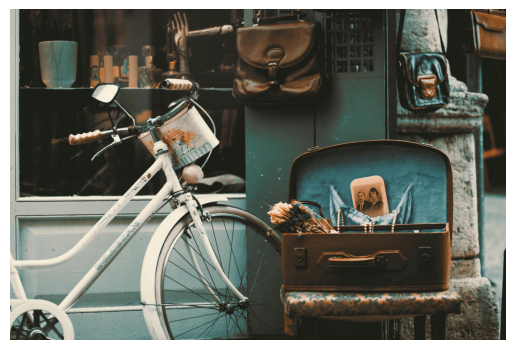

In [44]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """/9j/4AAQSkZJRgABAgEASABIAAD/4gxYSUNDX1BST0ZJTEUAAQEAAAxITGlubwIQAABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAAAGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAAABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAAAIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAAAAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENvcHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAAAAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZWiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAAJKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAAC5JRUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAC5JRUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAAAAAAAAAAAAAAAAZGVzYwAAAAAAAAAsUmVmZXJlbmNlIFZpZXdpbmcgQ29uZGl0aW9uIGluIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAALFJlZmVyZW5jZSBWaWV3aW5nIENvbmRpdGlvbiBpbiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHZpZXcAAAAAABOk/gAUXy4AEM8UAAPtzAAEEwsAA1yeAAAAAVhZWiAAAAAAAEwJVgBQAAAAVx/nbWVhcwAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAo8AAAACc2lnIAAAAABDUlQgY3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAoAC0AMgA3ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCfAKQAqQCuALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEfASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJAdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKiAqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOuA7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTwBP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZqBnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgfCDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woRCicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxDDFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFtEYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRqFIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReuF9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8THz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneierJ9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxuLKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGCMbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbpNyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTykPOM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kdSWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/dUCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5sXr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5rbsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/lgEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokziZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLjk02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adup+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJLssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2Pvgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO6070DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH/Jj9Kf26/kv+3P9t////2wBDAAkGBggGBQkIBwgKCQkKDRYODQwMDRoTFBAWHxwhIB8cHh4jJzIqIyUvJR4eKzssLzM1ODg4ISo9QTw2QTI3ODX/2wBDAQkKCg0LDRkODhk1JB4kNTU1NTU1NTU1NTU1NTU1NTU1NTU1NTU1NTU1NTU1NTU1NTU1NTU1NTU1NTU1NTU1NTX/wgARCA6gFfADASIAAhEBAxEB/8QAGwAAAwEBAQEBAAAAAAAAAAAAAAECAwQFBgf/xAAZAQEBAQEBAQAAAAAAAAAAAAAAAQIDBAX/2gAMAwEAAhEDEQAAAfaFWCVIYCrk7OK5vo5uohaYnN8p9Z8rc8InNFzagNZi5RAhiEaA10w1mqioUqLsedQJAha0XQSzqYudZmalBVI0MBMpAMTBpjE1GAxErlqxMAJaAAJgNA5pCVISYFTQ2mrQomaVkgDaC0MGmACpoQTBJoAQIYIAAAGDTLqaVgxtOaAYpoRSwU0rEmkbTKqXNMQCaGAiGUCB1LlsAaCVgBNImbmpTViTTImEjQAlYmjcsYMGmowBiGhiaBjAQwQAAJUlSaZJaBVIIAABpiBiYAAAAxMAYmACBgLQhAEowRAKDSAAAAAJgAmAMQAIYhggABiaAAAAEMaEMABMBNQBBNAANAAAAAAAMEANAADQAAAAAANAANDE0FVNro1WdCZSi5Ii4uUIRgANAmjb0/N9GNAd5oEMAaGCAIvKa4smXaNMBkiXL3l5i9DH0OXWa5oZrDvPQ2Tkzy1ghWENsh0iWwmhgOllXKb9GG4s9cUrl3wV7Y6FJBSSRiY9sdSuLs4zDbHdelNJmqSgCUIWvT871+fTDg25efV5Po6cvPXtefZnc3vnKaEAoDAAbTQjRLhn14GYCMQNAAMEAAxAAADQAAAA0AANANDENDQA0ADENAADQAAAANAAAIbQAAACYANAAA0AAxAAAANAAADQNMQ0A0AMQAADTSjQUNE1Idff53o65eZLM9QSKSYAKJiDmzoJZKqSryuVcfTy2NMQAFpnsvsdPPrrhYMc3lncj2MdqpYx7sprLoi9Y6XyE114LJVpy3m+hXH0am9xQXjdmiIzpLPE7NfO6Zrtvmda5UknRUUkL8p5H0fztwe34np6z9e89MdKyuV5MtOdnv0w2NcdEuK0m55sunK58jw/c8NMEObQ0rEA0xDQwQ0MTAEwTBAATTHpnorz1xJYIwFr0fN7I9Hivn59ZFG86GYUIG6cuRqGT0SFZydG3A69LTyqj2K8es66OCsdT1vp/jPr8628X3PNl8me/E4s+3JOOeul5Ndol5uXu5+nPmTN8zXMO+uK+fSMNcunMAP0ibJYLRNAHF2ctydXP1LGHRgzl8l9V8trPANZ27jRWiVQhAaEMQAC4tWMWaQEaSS7sVN51M1JM1GspDRJoBoYmNoHLBtMGqUAhoBDKQJAAQMQIKTAAQ0IaBjBpq0IU1KIaBgU0FAlYmCGiBCTQNAJggYgBoYBRVTS0IlpzSjSGAE0kU1NiGkGgpzStolE0NMQQ6QwVzUraajCAGSqRKqbJHNghIKkJNANA0wYDaYDFYAAAmAAoAg0AxDTQ5aCaRKpIk0IGqaEbQAqEJiYAADTBpiYCYA0DAATENANAAAMStEsAAAAAABDTQAAMEANNAAAwQIBgJgAAIViaIaAAAABFIBoABDAAAAAAAAAAAAAAAABpjuKXS4qaaAIaJipuUAgNDTBAG3oed6MupNMgFyCaAqENBnpi1xaRs3HL28SSAa+z4PVjf0W/n4c+s+ZXP05AjeHpnqayxco0yRAA0DEDQigQ3LAQdO+G4sN+YzhIt5hoZhooRo8g2rnDoygF0Ybm7GmObwXZ4Bu+YO/r8ms6lSazprzXL085mu9xdylpJKAGmAgpy0dJrON4DevQnAu7I5i4AGqaAaBoBoEBoBoAAABoAGIAaAYgABNoaAaaBoE2gBiAGhiAAAaaAaGIAAGAhoAYgBiAaAKkBoaAABoFBgmgABggAAAulRkmHR3+f6N5+bNTOjTQAlaBAGKky6KJjbOWbjasMN8EaYiGg6OfsPU6cOrfGHrlnQp3XLXoCI0SzQApImN81IqZctM7l30nTWauWprhtc6ztWenn4+jkmPTes1iaZDtOy3OkqWgeL8r938XrHP082ln2vX5fpZ1WestcnP6GTPP2cu9m6am80ZsmO0WeJ4fu+FZzgTQAAmCaGAIaBiGmIACYAACAe+Gq1jpkCaK2z7ZqdPTz5dfMFG8az3Pn081dcbxyrom5yNUSBVVkS6GVFqbJVoiOjKzBVOsafQfP8Apx9TwRwJtHmTjr6p5up1xjojmis1tUvn4eryLxnV1nnnsefjfJj2nXl55tlrH6MJwxUsjQcnXyXL6uXrJy2xOf5P6j5jWOITzsBKxMTENDBDQTB6Ro0JuWAVl1GkpUvOmmqUiuZlzciaAAQAxMYmDTABW0I2JWBDkKASAkMATENoBpgAIbJbAAVqpIVJECBgOosGgYCiYIBJTQAAmAmCABgDTNHDW3IU5crEDaBgLKauUJoCB3DWhOVA7AFDQU0BTRLVSwaFpBAmVM1KKaViQIlSEAIGIbAGMGACsGIAAAAGhgJiYhgAhBNISYkpoQ0rQIxMAATQwAABgAA0AwAE1YhBoBoGgAGL0eH3MdMPO93y5fPKnpyAAaYjSFSaQaAGCBgmgaYmgBoRSAEMTAAQA0wABNAAAAAANA0AADEAANMEADQAADQAANA0x3NrVBNNASNExUXKaaJgJpiANfS8z0Y00hssRcsQoCRg1mNM14tsdmlx9vGZgh+z4/0GN+j4focPPr5efTzduCYWG2OptFJcstsQAQBDExAwAAYJgdHRzdA+bfE5l0YkF0ZLUM1qiFYQUyFaJ2y1OkGYc3RgICgCKGzMGJplRSNNct5dYwktxViYBUsKmhzQYZ9OZfRz9CA3ZEahz59gcC71LwrsS8i6MyTqpOOe3jVAAAMQgV1HGbZKmmJqyHSEmIhiobSWNZaEAFYhAACtVwOgOd3AIALsxNWYmkkuqInTMGgAAGgAOjnclJpAAAFBoGIaAABoAGCaZWk6nMIOn0vL77z4ZczoxMSpCYAIG5o3NKlxnRWTtGkvJhrjYwEEA+7g9E9Lo5bY6oitYz2TXreVrpWek0s9olwnpDE1RhOwmMa556ZdfNad98+uoGk3PTrydGemkslVpChSaISlZ0a3hoHyH1/zNx4VZ1qfW+t4XvRQybWekHO7i51qalyy2zRNh4fz/wBB8/c84DQIBpgmgBiYIJgmIaYIYCYJgDQomImC31cW0v0Nc/Xz6eHyeh5mp6fb4vp8+mmXTHPrlGzTI3Vc89onnR6U6z5s+hOs8C7MtZ53qrIm5swVzrGvRzbY33Y4qWZ0dZraYhhTvBWdd8Dl78MJl7PT8Tozv0vJeKde/Ntc8vJ28XTn+iDkAABo+Lr4rNOvj65Zx3ws5vkvrflNY5E1nbAE0DBA0xMAE1u5qUaaxNRc1plotATQnKEObBAgAITE0DAGAABSSKaZQhWJiGgBITQAAJgm0AwExU6QA4kZTlolVCCYJiKaY2moAAAk0gqRKpCaYgAGhgA5ZdRoACsTAalbTGMWU0kgWIGjapQHKgLBDiWykxFiqUaFZRCBiTBRcWJNJLZUqkiGCVAm0DGDBQGIaBiAYIYCYJiGmxACGhJoSYiTkASjQjQwABMAAAQ2mDQMTExDAATAAAYV3dOd+Mt8NZv0vL7867ebWMdPPx6ubpxQFh6Pn+xne3k+/wCPjfnql14gmCYIaBoGCBiAaAAEwTEMAAQxCsBBMBDEAAAAAAA0A0AMQAADQAAAAMATQNMrSLXQFnQCoBCzqblAkYAACTRr6Xm+nGqZcIVIgAGgAUy1yXj2y1anl6+Mg9D0M78r6PbPl114359nDx+hwdOSA1k2y0XVNGMaZIAgYhoABg5oYAKkbb4bhnpmXzdPKVeegDSABIxTWLQ5O/iMNsdl6BMzjSBLWBSZFmdkPokw0rdcksi4Qg0Gt46jAByynLSmmGWuS1vz9CFIQGqAAAhDlcM7zXqaaPg7uEQCjQABXoef6Nzzc/TzSiGq1y2NMtszFVINMKTK2wszi4HUhvkSS0HR6/g6J6efnI6MYStNFXkFkMBAwQDQAxAwExDQDBAAAAMQMQwQADBNA0MQMvbHVOcTXf0fN9PXPzJqc9GmKJgkwQ0hpFHdWezEPSkxjpxmvMz0zumhomAejw+pZq1cy9ue7Oh5lm9c+Zvt5BnfvPy+yuu8NJrWW5cMt8LOXG8o7NY7LMb00XDSpTTXLWaZLatRKTmK52YZ6Ta0FTonw/e4WfiVpnrPvfUfJfWJZU56KLmojTNl6TS5xrmgqZ4vzf03zWscjCbAZLEAwE0jQDAExANA0wBDTQNCgNBMVaZ2e16fj+xm+Z4vv+FNx3+ftrHuEbeb14JzNOsXHRXNUvQswdZOzVPRMM+qa4cvQz1jzI9HLeOe9QxnokwehZmUrKEpWmhKizONp1nNaJM1oUaQSmGuOs/o4iRoaibF53o+dcbdfNuplrgcvy31Xy2scaZnYmgYhgCYAmgY1u05oBExU3JeWhqJTThxY5BBoGhACGCGCG5oBAxMpyxgKNA0AJiIEAIbVCGKxoaQUglYMkBBNVKqUEAICmmMGJgqGgARAKIESYIYCGAAAFXFjRSppjacoDWgZCuUhUrJbQ2qKQKhqACxNOAEU01YmNpygwJqRKpsU0hJqwGgTZLaRNigMBgmIbQCaGORywY0JgAADQAhKpEmIk0JAo00TQNANMEMBoGAAAAAANDBNDAC87Pc14evj38zj9TzunPPq5dbn01Fc+2HF6HJvngC1h+r5XbnXrcHTjjr5me2PXimCCYIaAaGmCABpggEAMATEDAQwAAAENAAAAAAAAAxMAATQAAAAMQAwAQDALuKXQipoBiVIiLi5QADBJpATNPU8v1I2m4vNAAADkKAVZ3Bx647Nzy9XKdnp/O+7z6+h4uvjy73yX059PL085KauXpnousgZ5a5ommIAQMTQFTQ3LBiN98NhxUlcnXgsaFRJQslOIKFVSjfKFF3i5djGVvlFvmToWZmlGfr+d7xz+P6PkJrmhRoQAABTTOzUAE0U00ollY65LXRzbpZLsYmAKACkNS4Y75L0VnSXw93KYm7Xne7OddAY+hy3Yc22csDQaZB055yWkDEwEDQA0AANDBAAwTTEAA0AMTTAAEwQMEMQwQMTQMEMTAQMQDQAAAADEMExAAXvj0JyCF6fT8v1NcvKm4z1csAAaATTUqLTq1TSteW46cLxTzYqboGIhhr7HmevcoFJoh3LAVaZ7rxYevzy59GeusbkPO734bXszmprkw7sc3f0fP7tSWsjqzKM9sKudyXN1DgyN6SdFc1NAoCKy0E+I4vc8LWPT+u+K+uue553nq5IEiWS4RSkWx0eR8x9V8xrn57CbQwFUoDQxMBMAQMQMBDQMAQDEKxNBDUaDv9/wCc+huObwfovAzvncuvW9LxfZ5dccuzl5dsptKqkNFJnTJizbTlo6qwedbTBLokyc9gyepcwbUvNHbNnBPoGsebHpxvHnT35WchvFmZSsVJyuGzHDp5+nP9EVDMtoVDJ4e/hudOrl6lWWuBzfKfV/I6xzDWdsTAAQAAAxBc6qMJpoCVaszbEpCVJCNDBiGmgQCYgaBhRJdkEMsrJdEmAADBJiSNAmKNUAmNNDQDAhtCiYJNWSqlEACaHUhbljEDTQAgEAgE0DQDTQxAwZVKlYgYrBjmik4bQqmkmYyyQLFchblyiYiaABA0xsFbTUacDTCakSasQAhoAEaHSBiYCGAAAAAxAxFIkYAqEADAE0AISpEppEmElSoAg0DAAENADGAmAAADEAwEwAAADu7fL9Dn1rg9Lkl89uOvL0Ong7efWObryTz1pn05m+FnqVlvy68HL38XTnmCuWAJpiGCBiGgaYIBNoAQMABAxAwUBIMQKkAA00AMQMAAAEMBNAAAqEAMQNME0y2qWmnNDVCm5JzuLlAxMQKkktBr6fm+mm8VFwIIaZSGQDQZa5tcWuWrS5evnWPY8/oxrhx0jeU006cOrmmswLl6ZarYBnnrBBbMzWowXXa8T7mcN9pLx10SYmmaVpzTXa/PUd0cRXVHOWbLITSZAaQwBNA0A0ADKQANORep5foy153o+dZLEDTEANApc6FNMTAblpQgeWmRXRzblMKYCAAxADUsK1KgdSriAToARJoSqVUVAkwkYAAhgmAKgQ2SUyCmQXIhANoAQxA00NDEwE0xNADQ00AwFSE0wVwDTEAA0NNDTBDQ0AAAAAwvp5elOQTXf1fK9TXLy5vPPUAUBAwRDBUqO6+fZmG6mtefp57z8yWm2CGJnd6/l+lrm07RTsGZqiNIo6sL55Xtz9K3bDLPRzWd1SKNksaJro89JSxgr0szTmaKztLoashroJiacrapPnvmPtPjtY0+w+M+sufTYs9KlzK8tYsgHZnatKpqa4PlvqPmdc/MAmwEjABDBDEwAEDQAwBMQ0A0rAQTSgMQCdX0Pzf0Fz0fN/Q+BnXE0W9Ht/P+yno83fzcu3Hlvjy7Ek1QBKEFSzRRUuhLmtHlUakKa0ebjasal0ebXQkkt5OrllkY9Ss4s/QWseau5azwvrVcXN6vJrH2o114tMRDBcXb5+s9HRydsuee2Bl8j9h8jc8A1NMQMAABMBDB65atA1KIYgBDVhLSS2AwE2lkco0wSaGgKc0aZkiqaHLQVAakaKhA0CJiABWAgDABQAAYNOUBAgsU0kkaEANqhpg0A00IaCWhpoEAAADE0DaZVTagwdBK2mrGZoDFNKyZqbBNWKk4bQoACAAAYI2m0wYA4AQ1SJVKpGkQMFUgDRDKQMEMABAAMExDTQ0wQwAAACWAmglhIJBAJMBAoAjQxAxMAAAYJpgAMQOna5rTMloRgF9/ndmd92dvl18vDs5O3HT0PM7ZenPWcdOLl7uTpyipdz39fB28+scPo8VnIqjfMYgGCAAAYgGgGgAABDEAMEMExKxNBMAAQME0DTAAAQwBMAAE0A0AAMAE0DAuppaac02nAqgiNJ1mDQIHJo5uUnWie7l7EubnXJAoYMQwEUTl0+XOjnmS7zkq6N+Holrq9H6ZPgH6Sl5fO6ucit6MNLhdHlJu+RHSckp2HEq61zJOmMStFAjEhpoAAAENAAAFAgBqGmCAGgoAACGgpich6Pm981pw93Mco1YVWhkahnTYhoBACY6ihtCPPTNTbHYpzSUIGBY0ACJSc8F6lyWdE1ym6wDZYhqsw00w6DOLyGMFSoScgJlCBtMYA0wSaCWhCC5tma36DgfdzmDAVX1nCdcHMaQAUKbgADSkxRrBkMNsdsqkHImgGhWmhoYmAJgJgCYAFb8+5zph0ev4vp65cGW2WeiGlGgABiBuKOzTDdKVjL5ejjOMQ0MQUqPT7ebt1zyurZrWqWI3gxW9LnHVM1wbsuNs9HNcG2lS6UhdKxo1WNr0XjpNU6BaZ0hGimsDVWVTFRQQ7DMsE2ow+M+4+PufO+i+c97fP6ap059YVwueWmVkaYdFw6bmmDXg+W+p+YuPKAaBNBMAEMTE0DTSsBE0AwBNKNAxNExKMEEw09zwfZue/wAL3fDmuJCWvU8rtPpMdLy8/HbLj6ck1NCYQrmwTUKkLTki7ipqyKlLhysQVebl1rGpbcIbyLNb5qOgzI0UUrubJz3VnuUj2+AQ0EA/O9Hz7no6uPpUy1xMPk/r/jrnkAmgAAQ0wTEMEVrjq1cEjE0GhWhCBoAxMFctIlUggAEAMNIZKqQuNCp0cvMMsLkKJYAhtACYDFGhGJgAoADmhjJZVImaVzIAhgdnFRQmMAE0JNAgHIxOWAMBA0MAY9JpXTJSk1YOUacNJiGVE3NkppCkxgCTBDLExDQ4bmlbBRoihAAKlUpIyxDAVJACgaEAA0AwljEqQgYCYmAmACYAAhiBCTQk0iTCWAgFAEAYhoGAJg0wABMABl3noqz0gkEgMDo57X1Lx349+Xh9Pg3zw6eetY9K8dufbLj9DlueIqenLo9DyvRx06OTrxzvzI2x68UxDQIAxAA0AANNAACYJgAmJgCYIGqaaAAAAAJiGAAAAAAIYCaAAABgAmgqaKpWoxTRUhpIidI3QjpyTkz0ysKkN6wJejv8rvs7Jc3mAA04JbJYLHM+GdOmMKKmqMXrpX1XtcXTm/JeZHPcjkqiQaAAAAAAQAKkJgCaAATAEwAQ00AAAUIcAgaYIGIAYFIZAmUta3ky1nNdcJ9OXyl7/BZyVpBIkUSxpAxAOWNyxsB51A98NUtxY2qpNEgwVNJMefoxa00qkrg9DzyQFGgBgtcrJTQ6mhNWRNwAwGA2gplmQ5BMGhEsDTfnZ1b+YJ6HNgUgUunVy6pcYi1DQNA4cgwNbyDbOUSmjoBmQMACZuBMBMABDABME0DAL35+g5GBp6nmejefFltlOgmgAUBiBBSaa6xoa6YaSXwd3n2czBQEGuWte9cXrhWmGi7uVLrXPR0ac2rWiFKs9EkUiyqlS7pObzemiYrqS4XDTo059Grh5pqYM1rGzoIc2OGU4caPOxzTMvmvp/Kufj/X8vt1j7PXn3z0ItLkVMZVauaG1Q0cHzH1fytx5KYoAAAJoYmCaUaYgYhpGAAmqYCGkGhRiRpget5Ho2et5HreZHmpjRthZ9N2+V6+bw83ocPPtjGsY6Zply50JrJaSkDVKpuHQ5qgedIbJGK3LhCVl1nUrhlJyk1rNy6PMl1vG5avKj6OR+754CGJj870fNuejpw3Jw3wF8b9n8ZZyASpgIAYIYAJgNC0kx3FAMWU0iqaKQ1AISaskaEORghsAbBSwm5ZprgLCaRtBTljVSAgGMEwGmIABA3IVUtaQ5UmkmbiwQgABiKqaGIAaCWgQCGCaZLAGAAA0y7m1bCVtCukQxkoDEMM1c2QqVg5ZaEJiRoKAAE4pzStoG05QVCHIILEAAAA0QwSopAAhgmgaYgATBDAAAAAAEFIBJoJqRJpEAIAQADQAAAMABoABiYDBNoq1pNRnrnZGi9rN8jL2vIM6l6z293lelz7Xw+hzZvmLTPtx7ezzvQ59Hh188152fTz9eJ28PXL6Gdrn08/m7uPpzhiuWIAGAIBoaaBpiBggEwBDAAAATAE1TBAAAQVLATAATAGgAQ00NAAAMBAwqaLqbmhUlQ0Umhb8+idEKLnDLTMAButVx9Hm9CS1c65ITVNOENUAow8/wBPz3TEATAOzj9A+64OPwZeCRWAAAAmgaYJgAAgAAAQMBAAqBLSjJbhiboxetGNWzI1DNaBktrMDs5zN56lNtImkqKolUEqww9Xg1zv6N+Dpx7fQb/Mbaz6vj7Vvn4h2mscM+15S5ILBjFaYimTnvBGsWU8w1eAnQY0aqbRAGGWubXSwsrz/Q88QEoAAMVLYyV5lAwuKFFIEAxBTTHvhuYS5GhiBADG5Acg3LEAaa46GSQUIG0CTQDRTkKSQAjoaRDgKIY0ITAAAAAAAYgYmA+rl6rOJpy6+z4vs65edh0c+eiGKAgVIEwVSzq0ndnK6cR5vp+Y1AixiA6ebvPQ2T3wvXPU0qKazx2wh7c+p0kWqzWWd9Dx2uRyy3My9W3B0Te0GdlZ2QtIVmyxVmmmOoVIu7m87VMlFbM3TpVNQc3VFnw67vN1y+36eHuz0SqGhAE2kKVEppeT5j6f5vXLwypmhDBAMEMTAAECgAwETAQ0rE0QwQxUNINMXZydNezxdnNl5CqbUxJ6nu/L/QS9PN0cvPpzxvnjrnNyVRoZRtnnWU6xUsoNJrOhhKOQpMWZosihIwqVMKUubKrNxZFy1eZLqoD6tJezw0CBDSeH0PP1nbq5emVYbZJPx313x1nMhzQAJiAAYgaAGIYCvTOinNSqampaSaCBsSiBJGhKglpjFqEdHOqctJubCNYJKkAAaDfLbBQBGAo5EuRiKFg2zJpaJLrNbQSgAZ1NzLAQANMdJjExDQIQgAAENA0A0xAxgF3NrVRU0xOHUUDRLTQNOSRxYk1YmAwYgAQI0FMQU0StplCUowBoCWqASMTRiYAU0AhocsBoAaEAAAxAAADEMBAAAICRolUkSAlgCaABQAAEGIYAAAAU5B1Oi6UnNTlrkmnv/P8AuY2/F9/xZeEc9eN+l5fdnfo5bHLr4/P3cXbjfpeV6Wb2ZbRy7cHH6PB2459HPtc+npF8u3Jw+jw9OeCZrAmhiBpoAYgBoBpoGgAAEwEAMEMExDAUAQAAaAAAABiTAAGmgAAAGAhgqmjSsia0IC3mzRSKORKmZsJaRaR68unf6fZL4E+xw65+dDVzIyEMpNECaFwehzNecVDTBi1y0Xuw6Msb4U1vmAAAAmCYAAgABDAAABMYAwDTTGy4A35+jAKlrQlDcBSQVWbXp5KIwu2IYsOwh1ImMSty5mlyxpTzvOqI6IxU1irXTl1cjkls1kE1TFAhWNIsEShAWAAmI234tzoAsxz0yl6nNI+Hv4CQFAQwA6+TsTLDp5ldzQmBMsBNAxDuLHvjsc03BQAlUgwGqgQ0NAMAuosyTAaY2mKbgAAEDQAxHTFSZCAAGJgAAAMAAAATABg+jn3TlBLr7Pi+1rl5/N1cs6AE0DAAQBA0HV0cfQm1YWyvM7/OaTAEwPR8/wBazvvCtcdFNGiWctTBNa7YWdGadmWdRjpe/LprPURoOaFw3xmPQjnbXRpw6R2qLXHPTO5Nee9Y6ydM9L1x0m7TcK5RQiqqahzcngfM/a/G75fS+1899BK1SnSRoAYmJAcLzfN/S/Na5eLNRNsTQTAQxDBMBDSsEA0MENAA0jTFQwENE0w2x0PakuTxM9sLpoEr1PJ2X6LPi149wlZ1Rk7Orbn6UMuyLOCd8sdcylKrmpWMlTmhjJc6pWRNTZQKWgAkVjCqScxVZUaSlL9bNL1+JoYqQPzfR8646ejm6FWO2Jn8f9d8hc8g1NMEMQNNDTQwAABMUaDSs6VyxIGhubAEoNIk0JMATHpnRrziGDJtUCeplO2Qk0DQNywGDTRIBWi2lhNLty65pGmellzpc1ysdjQRM1NiABNAwG0xgDlglSEmgBAMEwEAMVCYGlxS25craatyRQgoTlaEJNailpEBZSFDEqoQDlg0DpOViCmhWIhpFgACCwaApOAHQgBOSkACYmAgYhgmmIaBgJggmKIATCQCU0SNIgAAEMEAAANMAABiAG1avd9mdc89fHnWME9Od+x4np436nnehz8+vhTvh38508u8e3pl1cPR5fme15PXlz9/D1az6wXw78nnet5vTnyaxXTn622PRw78vD6HF058aa3zQAAA0xNMEMQwQA0AAxDBJoYqEMEmAmKAhgIAADEDENDAAaBANDExkuglUyCpAABA3IaKQ0l0sK5JVJF6HA1+o2+UUfQZeJ6Nz1S1cICUEAEloQ86lfPx6NGuN+rueHf0nZL8rj9Z8rNYgawIYAxJghgDogsMzVrit0Ym4YvQiDQWW2S6JUOlg0Iyely4mrMK0cuRqGT2cuL1qXB7owNxcTUTE2DE2Zk9XKUnNQqqyW2mc6swN1XPPQJzLoizKdlZitpsynUsxrXezmx7/PszZdzmmgAQaDsvn3MY0yXpqWlcPdw1IEoAAMO7h77MuTr5R1NypjIneTI2Ri9JEwL2w6E5o2yUYxK5JGFKtTB9XVZ5k+1wRxDFq42Oaq0MDSAaoSqRKkSNDEwQGwkZgIAA01ABuWAAAAwBMAAe2OpzDC/a8T2Nc+Tk6+SbGKaYJAGoIQEHT0c/dcZVumeDh7uGdUMQAK9rx/audJ0d5TSKrHoRxaEy9zy6FxtSghqnoSmnPmegs7agVJOka53K6KrPaKJ5+vK55HEXn19fB2NdQ3jtTKVTaIpUU2osijL4z7b5a5f0vyP1tzY889Led05tQKis5vNOT5r6L5vXPyk1NAACYmmAmIGAAJghgAKmIGhBoVgIACAHedL7e3J3seHyep5s6IV2Q+jSzm1MZrqrhedd9+fpm93T5/VNetrw9G+WeXTnjfHO8c++bZnQhrNpiY4TEKNEZsdgNKJpG1Qs9JIoLGJH14l6fHaEoUkOD0OGzXfHoM40wTD5H7L4yznAmhME0wBAAAwAFTQMQXUMoBVFwjuGUApFSggENA0xoAAAAbTGEFCYkAAA0xjQk0FJl6YWLfnqUM3ZNzRsZaS1l6PnyoFqJCRACBgCKaZSABoQ0EgAACABggGADA0uKWmnKxNWIKEwaIpEjQrJVSITsqQAEMAAABlE1KUmAmAACAGgTQ2CUCGCoYCTQNA0CCYqYhpsQIY0AAACYCBiVISaJmkKalAAEwABDQDQAhtME2IaHrlqvRvyGddHJWaSFazHfxdU17UvTz+jw+L1PN78I0zvWfd7fP8AS4ejl8f3PK1jzN8q68vb6Obt4ejn5PYzj5qfQ4+3H0enDq5deTl9Di1nzs9cuvIYkaaAaBpgJggGIGhgIGhksAAAEMABghoBgJgAKDBA0SoEUiarsl5ev1/WmvnK+oI+Vf1EHzh9I6+Tw+wwT4/H6rzbPEXRhYgCtseiXquDOp5tObUUpXNCBoCvT8z0k65cMNIWhAptDJYqn0Jr0PVhZ6dC8jzpr6Y+WmX1vi/S5rOF9S1jnfQLg90ZGwuS3RkaozdkQtGZGwYvapcDocvOb0c1dBLzvoqXmfTK4vS4yqxczQTMsJmwh0CuKHNBKtCKa5LRJDKqVqpc7dXKpmsJUSw7ViVMmNWYZ9ErhPRnLkaOzOrLE3Nzz8PTzamk3lZI0yAAAadPJ0rGWkHQ5dl8XbxRLQoAAIfdw91k8nZxw7jRVU0aJSWpBkgS0Po5+lMsN8VTVDm5EmFbZWbel5npXn0+Z7Xk3HkxrnnvXRzdRjRIZtA1QTcAmgQACGmGgMxGkGgGmoNDcsGAAAACaGMK0jQ5UBfseR7WufDy9fJNIZNgJAAASsTTXs5OhOq+S7jk4t8J0BpGCN/Y8r1dY6awti1EnTXNdVh0ZxhrE2dUly5aRsXG+bWee8Z1OjWs1fPrnVUkduvL1TpOXRkkJoynZ6xHTGkumiudFTmCKCSmOoKYqDxfb89PlPsPjvrNcu5Us9odNGErSSh51FnnfO/QfO65eYCmwaGAAIYAgYJoaGIGACggYJAYohomIYAAL6XreN7WuXB5PveHjth04dVnb24+tvz+T5v0vlZ6eNHbljtzK51m+nitfV6/J7su/fl3ucstcuPoxLjO5oJqhks1LApSyrysE0AAwBtMUXImTZSCz64H6PKTSEwDzvR8+46d8OiajDbO55/j/sfjbMBOaAAAATENDABNK00MQOpZYmKKQmmWSwRIJoYIKQAMRcAmDABNA5oQIGgYBtmSULQU3AXDGiBuWFSw6uapfY8v0eLn15HL68RVIgQAA0FVFDYCBiTCVSJYhoYgAaYAwaC7ilsmpWArEDqWMThpoSFYS0IRYxMEmDQNADllOahtCsTBoGgByDAGDEwQGUgByA0wlgNNAAAIYmJpgAA0AAJgkwSaJVSJNIgQNAwQDATQDQNBpRUsRc0aZ6FNVKp6kctJ2TrFS+108fbw9HD5Hu+TvHE9X05ej6vk+tw9E+X6vBc+KtM+3D2fS8v0ePorl15ow5OmOnPr6c9sdOfl7OW58zHfDtxBNEDEAMEMQA0AA0MQADQDQDQDBDAGxFNczVmb27M649Pfvj2+Zj3ObePNr2Nzwn7tWeDn7PPc8/ur2pVvV1IxIjTJc3yclnrPzesvg7+c+c8n6Tw04lU6yVIU4CiWIdLBpoc51VLy+lntm6rOh1FS04qWh3Lk+nc8/bu2riXoRc8c9as4p7xeFdsy8M+hR5R6RHlv0hfOn0pl89ejJwPsZxnXEcy6FWL2cuJrBJQsjSCsJ0SlIpWROisQ3KgRLpIm2TOhZFFUDcQtFZLp1BaSAmasiYsyVamKTd89mryF0edJcwrNEnYZVGdF52W4dHPXFcrDTPeN8rzE0IAwQD3w3WYvM6XJZrxdnGSBKDQAD7uHusnk6+OHpFKNUE3JBSJTQ6lldPN0meGuIUmNOQQy6jQ29Ty/T1y9HyPT8tPLy0zz2fRh0EE0RF5jpBUVITSECAAYBoDMQEBoGCgmNpgAAwQwQ0Aw2qdE4kxa9rxPZ1z5uPr5JpDU00AAANKgZr1c3UjWmUnn51NrQI0w7/R4e3XMvO2bd2ZPTOwJSkUpa6OfWW24XpmdVyW2cK4swpzc1Nc69fX5fXL6mUk6ZS4ud9uTSa6JVK9M2amdQJuk5oYCzeak6ObfOz4v6b5z19cvfAx2QRWkiEmEzUJ5/wA79F83rl5oE2JgCYJgmmAgYmJiGJgmlGCACiAYIGJGhqDR3+74X0Nxz+F9N89jr5/Xydep7HreV62uL8v1/Nx08jDrw5ejlx6sunPnA1i/Q8zaX39PP6Ma1wnDPToWJLq8ql2eRLZBLo83LScrM07IYxiuVMQJhCJuXBGs/aA+/mGmqBh5/d59x1dHN0TU5aZ2YfG/Y/G3OKpTQAJpgIGmgYCGKmAgBuWW5oUVIADaAEAAAAIYVLHIACGANAK5olUhNAwQwYwQ0mDTKm8wGCpAJBamhDkpJiGgEDQwuKKExNA0BI0JNDTQAwEwABplXFFVFK3LlGhWwKEQxFJNEgIgVgAIEjBKwQ3LKaYxOVgDEwAUAQAG0DARpoYnQhINCgA0NEmKmAAIAlYADQNAAAmgQEzSJHKJMEADTBAMTBME0FOGUkFXna6dPL6MvZy+l5zPmyxpUB6XpeR6nHvHm9XDLJC68uz1vA9rl06OPu5V8Xn6+Xtw9X0PO9Dl1nm6OUxZWs91us75+Xt5Lny+br5OvITLkEwTAAAAEMABMBNghtZNGZPW45326zXnV6u+deLr7PTnXh6e/rL4Gnts8j0unVYzrCM7vTWZNMNSuWPKjbbxfZ1j3uzi6JronGLN55lL1RjkZ+T3c0cfdlZ6KwVY+N6fl2cEaRvmgAHoT0dm3Pryaep0Z14le07PEftM8XT1C58rT0WcGvUjG9MzTTjiz0Z4A7I5Ub5xQBBZJK0pLrINXzs3WQbLJy6JSVLCVrBE6QIYQUyDRmVWiJ1VmbqBikHla6EqGZlmj52dOnEprqXNJ1xzSnUcgdc80nTfJrNbLAs1nIjQzKcgNwyqkWySLeZZo82Wok0yMzRZqy5hXJlcakTU3OsORA0QAABvjopFwbuaTbh7eIkBWgAAO7i7bFx9vGOpqUqaGhBIhywVJj6OfoMctMwqaGnIAFbZWadvn7J6/nxzphFJp789FzIOQAAYgBoSpkjBDBMZLGSNiGEsAYCYCABtCpAwDo6efuvPxAJ0r3/A+i1y83i7uGbE1NNMJoBACGHR1cnUm3Prys8SQ0xAXGp6fXn06488b5l6YvO+jKXc1eTXTDpzsz1kzrWZmqrGjacmm2vNuumekpjO0zWVEGjzyl6L4dF6HzEvsdfmelVMubl0Cc0MYkjkCmAqr5NdHma5fcVjvjrM2iKFRLZOW+Ced837/wA7ccKaVghiBpgmAmgYmAgaGCaViEYmoJgVZiUgtUPK4Ov6P5n6K56PB97xMb8np5t9Pb9fyPZvLTz/AEuGb8fn7Obz+rHLojU4c+vm68JAueru8jbHT0M40x0ktS5uiwcSuz52nS+cmumuWo2WaNKyo3MXnVuSqUoIc3MFTZ9uk+3BMAADzfT8y47N+foms89srOX477H4/WOdtZ2CYCYJgmAmIYIpFLJaJGFCBJoEwAYhoAATBMRUsAAQMQMAQ2kUnIxME0OpYlQIGFKhRpmMTBoBMEmDkYNMQAhoAB1LKaYgAAENEjBJgIAaAaYNMpzRTlq2nDTFdRSsVCBAhAmkkc3ICAAYmCYAgtDVsJWJjBqmAhoAaDTBpoAUmAgBNAMYkMQ0NKhAAANAMQDEA0A0SNCloU1IIEQ0NDEADQMQAAAwEx3Frfpeb62b28PVwXPC6aw6Zr2cOvPrOFZWKLjeK93wfc59PQ5+vHn18Xi9XzuvH0PQ5e3G8OXq5znuKs9O51Ofl7uQ8ri7+LrygHcpUCVMkoWHbM3pcYHTa8j7dZfPr0+rOvFv3tpfn9ve6JfB7vV1PN17sznqyydM5s3XNjZ2Lh0TtXLC1zOI69uGrN8FlnXP5PoebrK9fx/TPe14NpreMZs2nCc63zxzzrUwcvW+cs255w1jLl2w3nmy1y1lDEXteX7Wdru83s59OrPAudpgsqoRrXLFnbHIjqnnk6zizmuyeKE71wC9ccjOp8bl7K5FZ2Piady4mvY+Jx1vjK7jjI7Hxldj4XL1nGWdy4yOueZHUuRHUuWK7DiUdi4yuo40dU87Og5w3WKNjFWbTmyzNlOGUkFJC0kAJpbhzTQkYgbQo0JVJygCsUpSQMVAVUuZZZktZsxnTKycrjeFLEqKkAEAATB6Z2qm4Nbys6OLt5EzGKlYSWEd3JvZpx9PPCuaUuGOaCFTWKYiAU0zEc0iSkCYAAJoBoAYJoAAaYAAJiBiKQIBiAaBiAAGSDEDEDaoSuRNpWAghgwOnv8AN7tc/GAz0r6D5/6DXLg4e7hm00TbE0EIYAmw26uXtZOH0fNOVpqhgtsuk9fbDa8idYsznUsirU0aLoOd9ORnDgpUS5WnK7vXWcbqFu8JzroUWuRdIp10m/Oy9PnPOXVMdPr+V22dtYbt0IVJxGlJ0xVDKSZjk8X536b5PXP7T0PnvZOozvPQTVAgfPvzp4nge78/cc4NQAABNMAQDQNMEwTAAATBDFBNDXGl1aJZRFgCN/e8D22fS8j2fJzvw7l6e57fh+3efTydmE343L18vl9eU27Ofm7sunPz105deWYxKvEOh8xL16cLmu6uFy9081S7vG5SipYWgSrCWpNHiVs8ai2tJqMd8NY+4KOnJJsBAeV6vm3HX0YazUxplZyfIfYfH6zgNZ0MATATAEwTAAC4pbCpZVohVFgmgABoAEMEMTE0wBklBI0DTEwENDAE0DQBcUAAAirzoTgAAaAYgaAEwVTQhoAQ0A2mNgNMEMFNISYIAAQDQNAwC3NDFSsAdS5aaFYKGIpJoSqWUmrEADAABAA01bTKFUoANpq0mIBAGAMaAoQg5dIaAaHLATQxAAxAA0xMQ0AADTQACTRIBM0klVIxAmAAxCYAADEMAEVcWX6PnejnevJrzQOFvNGZLemFZ04c2CpUvb8P3Oe/Ynd46eL5/vciab2l4ubq5LnFy9T1Onk64z5Ozls8zh78dZ4z0NDzH6+014l+9tm/P7fQay/P7e7Z4W3rs82vSzrhOhI9oVnRpzPWeh8uJ3nm4Hp8/kQnqvzdDpnmsuEke2FTW2eXMvXHPUbLnma7YwzMuDfm68r7OTqj1d+LXn16JxgvPCNZ645jOtZxzrsfE2emMY1NcpjWZyqbEAnodPOufXq6+Xpzq6wy1jpjlzXqz5Zl2nJ1q8yNJmSlKscisaAaRTaIpIGILSCiGUSyhEtEyaEtRpJZmS3KVjSKESgJWMSGgpoSUkiiQbAbmpQaUY4SqRtUE1MrE7Ck5WmlGhBhKBZNAJiGCAYoCSnAaKQqHFk5XnrMS1rEjQ5pCAQAGgHU0rlookNDNjEinIUSDBDAGJiYwcsAAVSDENCKEAnI2gAapAjUsbkKQDQAJgIByxubCQJYACGmgYASxoQ2qAaChggBMBMAYDQVvz9aecmLXu+D7OuePB3cM0hk0JoBoAAE139Dzu+868z0vKMRk0JoPS831rPUe6vOFTTFaIzioL15Kr0csDOsszmmvQ14+lGtImttuPo1m5uTPLXDOta5d6oMzbXj0l6YVVNreUpbBvOqotSqaQ2OppEujlimpTz/AIz7z4q59H6X5T625ek3OhNESUqnn25U8TwPb8S4xAVDBADQwQwExMBMQwAEwTQxCtMQEDctQEjTF09vwvauPb8j1PNx08GdMtPZ975v32fRw2yXxuTu4/N686TlmNoTmy6Y68ueeidYwnonU51uJgtVZmUgQDrNmjyDovkJe2uFy9tcNTXacl510XzbS73mSmehvn9iJ7wnLEwQ8/0fNuezbHeayy1izi+P+y+P1jBoztpoBoYgYIYmIGJqld5WUhKKpRIQwAABMBDAEAAwBoATBMAABNgCE0DQwaAAGgGJiBDEA0xMAAExgDEmgBAANzQ6ljQDQAmhJoAATQAwBDAKpA2mOpatpysTVjQFBKASaRTSsQCKkAIBoGmh1NLQnKwYOWo0DQIwBgA0waAB2SNAAAAAxKkJiGIAaBoGhiYgYAmhKpJTQk0kFSAAACYAAAIYAMQxodxZp2cXRnRk8bGkUxBrSedTU0XO7zvj9vzPbzfW0y1XPPfOann35k5eXq40ym41n0ezg7pXzdPMcvbj68ub6cFlxmdVeeWeieXNz68+TgepHz61j6LDizzvoryumzsnncvXlPJcdt+bu1tz9EZ1w1uayrwzs664mnUczO3LDOXTLI1Oh5ktZmNm2eGdlqdLNerHfG9nnWdOCLITmwWc2XExZoYtNTNVpBIS0jEz0Mnnjp6OnHWdEiEqVSqaJtKDkcuEBKxoLAEAMYqVIEBMbRKwBNgJoGgbTlABNokc2CEEischQwENCGIhgCajHCGwByjQAANAk0NplOXNUggBgIHUMGMVNKlQkqpE0xCKbgTSAMouNYga1mRMJaAaQGgACk1EIYmDqBkhTgKJY3OxC1wHUUUFGaSLUhZLG0DAAEMVCTQxgTckBQhgmAAyU0DTEUyLYIqSVYSAAIbLMRpAGK4tWAMGIaAGAmAAAD7OPrufOAmn7Pje/rnxcPoefNAiapIAAAABHR1cvSleZ6HmqgEBA/S870T0+jy9tcfQXM10eLioS1Nc7uXDPqwzrk5+nBquzh2l7Dmu51eaue3bi3XXLWpeLS5seL5s6d8jm/S18/XXPr283sXp3w0Xr05tJvoWekSOC3mymqHUsJuTP4v7X5K58/7f4D7XWfTcvPRgQTSqeXq50+c8L6DwLnIAABDAEAMEwEwBDAABADFE0DEjEA0DTQwS36/j+vce55/oednXhZbc7Xp+58/7KezI7PL8/v4vN682qmnLUsTcazktFvEzo7MVqrM52m5xnoVnMulWc76GnMdAcy6kcq6lXMdMmOl3C2NM6WioYyX65Od4VAipNTzfQ4Ljq3595rOdcrOP4/675HWMgM9ExDAQEDAEwAEMEtCYVLGASgEDAENMBDEwATAAAATAEwEwAAAQwQMQwAQxMbVmRSExADFSAEDaBiokqRAANA0xtMYAAAgFLAAExAwAAACqTGJq6TFScrc0rBwkykAKaEmaVkjSJiAAaAAB1NK2qlEOhhDQxMAAAYDBBgICxoBA1TQAAACVAgYqQCpCYDTBDQJshVJKAkEggATEAAAJgAAAAAAFVGheuVzUxWdgJoqVLq1OdGuPRL2bz6PLtyd70udbiavNzLOG2UYcvXy1yxc6x1ej5fpS6c3VyWc/o+Juerz8xm68t8dbGNayiHc6YbyvJW7TXOolz6ue7N9eO5rpzmblZzkvVfFZ1zzyXkOwbLBtZtSoqVCs2nNFZk2IBHpGi768pnXYuOTsnklOmMVZagsaQMTAENoBNBcWdeFxnfVZpjea0Rk7SyqlHIgkVjlqxJlIYggAGDZLJSpUOBNiapZGIhghtQFAyRksUtUTSRSyyWwSapzQIZCYAxiY5UAMAAAEwGiWMARTkloTGIVgQAx3NyoaCaVIcolQRNKxAWCAnK41kkLmRgk0ACAAAKxA0ANM7OXr5EgBQAAA1yorOpHU0U5ZE1IxA2mMTAKEOQcsAChhLAXRzM6YxByAdGG5ECE0xNMpSxjQXlRalEgiunm6jnaYhghpWhIxBTTEMJbQADExdfL2XPmgpqvd8L3dc+bz/Q8+aAU0AKAIAKAJv0YdKYcPbxKIaAg09PzfUubm83PbXn0m7hlkjC9eSjvyztZy6ZxvlnsVeZGvE16XT4/Yz1bc16x2bcO9zthqpeLHrLODP0+THWNMTO9teR65+10+N6tnW6c6KhrEa8saXybHTeNLtWWiNyB859L4dz8d9V8t7OsfX1Dz00cuVTchz7YWeD879H89cYJigAAAhggBgIGJiGAoJommqYCBohggYIYJiv1fJ9RPoOLpxj57m6uRru9jxfcT17jXWfJ870+Dz+nEo59kDFFzZmWazmUWQ7UQqWpLbTN6ozdOySnrMlpM3oprM0VkFsnSaQbYwM6+qtT05sYIEHB6Hm659m/Ptnc5a5WcfyH1/wAjrGTms9EWiQETAQ0MATTAQrcsdSypqSUwAQ00MEMAaAEMEwVJiAEwBNDaBUmSMAEMAAQMRdSEiYmmAmCGIAaGK4sJqRDBADEx1IUgGCAECYCaAAAAYgAKpMbVKMFBg2nK2lDBUACGiU1cqalGIGgASKAGwWnNSsaCgGAoDEDRMYmACdgmIk0rQAAMQAAAxACYANANDQwTSABKqVmbkScohyAAAxAAAAAAAAAA9M9C7kmpiosaTQ1x2XSKmae3P6Odel3x089warUkalkpGeNZZscvVzWcsa56l+l5PXHpcj4zm2wrWelYTNb4GNzpXPVzrWTXVZI1WKs2WQUZzZtXOHQudGiySbTkVooRvXOzdYI6FgjZZhSQUJDkEAFYhGIAAAQwAAEADAAAExABcWazSmvQ1jXn0znXOWc9ciWikmrJQ7JGkTCkxAAg01YlDB0VLhgSsTEwoGQJpRsiWAoqbEnNgmhTSsBFNMgGgKQMJRgCAaYJjAQCYBIMEMTGANpytUSpoBqh6TUqTCU1YwYKksrQjCd41Mp0yuZmp1iQdkoYk0NADQAAxMQIqoo7OTr5ElDVAAAFTYp1yHSZTmiJqRoBiCiaDSLFF5gDFUssYSqgQkWSwAH083QYIQxMHNDqLEmENSWpAAK6uXqOdSFEotxYMQqVAmhgCYADEMF3cHoXHlJk2/c8P29c+bh9Dz5pATTTBADQxNB0b8+pjyb4iGIgDT0OPrXZR0XlnesiVRc6GdZ3SvSay0o3yllGnTHRnrweN9XxZ38xt3xSvG9cttecjvOWl6L5Ys7cMtZeHLszz0wvs6bjm9VdltWnNg5DK1LjdpLpWpSpEVBp5vo8lnwW+eWsfoW/nelncuKWgcRhvlZ4Pzn0vzVxgAomAIBiGhiYgYhpgIFGAmmAgBiIGAgYgYCnocHdL9BLE+e4fQ4Guj3vn/cZ9zbDfWfO8z1/L8/qwB8+xNSkjnUYrgmkJ1JnOkawqTpscqWiSW3rKLSGdtcjWbEMAKQKawtZufqQe8IaGwF5vp+Xcdm+G00sNsrOL5H7H4/WMams9KhoQmCGACAIaaG01TEDTAaEAAACYDYk0CaBoGAAgAYmIaYAAOWJiBiGJgmgGigCWAgAYAgGhiaYUMSciYAhgAMTAYKkwTgYAIAAE0wABiLaY6m1BkoMBpqMIYITCpGiVUpKauQTENKJgA0bTWnNStgo1QA4GMkqaaGgACYgIpy0jTFBMQ0AAAxDQAIyWoANAgACaWRyJNEgkQAhMAAAAAaAAAABoHpnoWMmozubJYI9ctZdIctP3fG+h59PQ2mxFNM51zljky8g7ejz/SlOTp5THLXPUzl4axc4rWeisiXVZQbTmWaPKTonFG05FmizDRQiyBKEAmgaBgAmhpoGgYmIYIAYmIaE01TBAAAAEwBiABMEMEwBORgBpnoujV516Wme+dZZ6ZSxLmalCsUtayhCNDEAJUrAGqG4RSFQ1ABUEAMmkDEloVQDkaAgqLEmWJASDskYJjEArAhgCBgNAADQoAiTQDQAAxg0LVS81oKaah1LKcuVioSYFTQRQKqCFYYY9GOs5TcbxLm7MmNJTQADTQAxAAAFSzs5OnmJAGgAANsegMOvkRXFq7izOQENAAOoorXHYjPTIbEABq0BltkQAAqBpj2w2MZaCkFNMLljTRkqQJgAFdHP0nGxAAFxZapA5oE2IAAYgAAF2cm6cSYr9vw/c1zw4O7gmkDmkAoDRDSjTTa1UcmVxTQINC9XXzdUPow0vPqrn11lZdAnHPRlNV18Xab83XgY3L1jfp8/bPTuWF53MbTXmc/p8UlTvdnDptonPz+3keV3xZ0aa7t563U1NqlYKWpos5J2xjdTJvXPZvWbW2nYYbSnwnn+z42sfUfS/DfZxswz0YBOWvPZ43zn0fzdxzMSgMEwAQAwQwBK00gNKNCAxUxDARNAxMAQ0NTt4uo+j0w6JPnvP9byp0r3fB9u49/p5enWeDzvV8rh6eZOeXZghpgnNWUKiBsidIsigspt51KtWS6NYatmVUzJ2hS1cpt1JcpaQfVDXTmKpGCDyvW8rWOzow6JYy1yOX437L465ypE20mKhkACaEGmAIbQrAAABgkwSYABQgctAAJiBgIGAAgYAhoYgYCAYDQAmAmihA0IBgmIaAGgGI0FRKqRDQhghooTBgNCVgIIBDQDQADQDAKqaHSasHKmmDlq2KKAAEJNURcJKasTQjQAMEwG01qk5WxqDcItLLaQAsAAAGgRMVCYJgAAAAIGJgCBgJggmKmCAIByJVKymhISSNAACYAIYACYAAACYPTOzQHNRGkWSCStsdZaTlrb6P5z6Tl09K1YlU2T5unhy5cy9DWevrDn1x5ennueeKnWc8dstZwjTPeHUsU1IgSMEDAAAExAAwBANANANMExDTQ0mAAMATkpAMQACiaSkAAAAAAAxIAAGCGAIANctVrTLbOvR2w3xrLPbJc89M5pSFzKFqMTRAAmCaYqEAxUwCpYwJWIGBANE0MY0E3IgQpqbEmrBCAYIYIAGgY0AMTHKhghgkwQOxDSpNI0MGwRRKNuVJskqQaZQEpc0NCKGEhQApWIsyy0x1mYvPeE07nNqiAaIGCYqAAAAAao7OTr5CAAAAAOjn6E14+3jFSamkWZxvkSMAGJjDbHYnLfEBMFQW0wy0yFU7AuuTiNMw3x3MJ1zEDCkx1GggRCpmapANk74sgaQBiuNFtNCoAaYCYhoYAhgurl6U4BpT2/E9vXPHz/AEfOmkDmxAMTQTQJi73lScqcg00BNevfHSNlLR68+lz2VjrrmstcZTXn0XuObosdvaXz12cpvphvNEHIbRhpL0dGW2sqeiVq40ms41mK35nW18uh11nc0ZXlLrfNRtz7peduEbyR2aYdC1Q0mbVfJ/O/WfKa57/b/B/YHttPHRVFC5+nms8L5/6H5/WOVDlABDBNMAAEwAVAwTQMEQ0rBDQIDBDAAABTo57Po+zzvSZ8XyPa8bHVet5Hqb5/Q9vF2XOHlen5vH0ckVPLuMBicrc0AywGSxOk2SwRtNQYhSdlKgRQStFZkMsSZchLsTRX1YG+YmgpIPJ9fxNc/T6efaanLbAw+M+w+NuYAm2JjECAEMQTQMBVLVoYCoTASABoGgaaAENAAxBNKNBSQA0DQMQDGJNDExMAQAxA0A0DABMBMABATWwBJoQ0AgBobGKkAArTEkcjQA0xAADATKpUNgrGTSbQABUg3IUChzUUSxITm5TAAFAEGMKmlqlU0wcNpysBRNWCaZBlJy0aAByMFYJitJiYAmAJgmkYCgCAMQAJggFUVIk0SnKCaBMEwAErE0AAEDEwEyqjRdLTzrKLz1lAkeuWq3FKa1+k+Y+i5dPavHVXzb+bc+b5HXlZv7i359csdudM+Xo5rMYudZzy1z1nLO8t4VQzSQJAQAAENME0DSYNAAwAE0DEA5Y0AJoaABghoYACYhytCaAIYAAAAA0CYE0CAFSYgA1z0K6MOjPTs3w3zZw2xzqIckzUakjVgAg0ADCWDAVDBMQ3NDE5QGJsBMgYAEgAIciSNQliEsBDBME0xNMVJqA5QYJpgAS2kSYAAgKGyAblQwYAIAYDC5ZbQ22ZjkYANBTSLlSZZ6ZbxnNRvBpFGNAkgI0CsGSAAMQAMDs5ermM2gAAAHvz7m/H18iDmldxQZ3AmgYmAA98NxYb85SGUVRLGTlvmRtlsbzWRlDQb4bmMVAUgsTC1QhokkKikAmJjMwEGmLTPRbTQqVAmhgAxAAMTJ6OfpThmkp7Hj+zrGfn+j50qAmhyxoRSACWboRziEBoKm17NJuVttkHmml4Fz0LO7JZOddV8u9m2/HNnpcquXm6eUs7uTsU159tpr2clr1GLs3vC5t51CWSlyM4j09PPqa9A59C6dLbVLz8vVwpq8tDp6eHrN3LWgE8b4z734XWMPqPl/Xs+4caY6RFIeWmdeJ859J81rnzCcqYhiYCYAgGlaaAaAYAIYAJgAICABgAqaYtIo9j2PD9tjzfF93xMdsfT8v0NY+j7/K9bWOfy/V8vl34c9Z4+hpUA6lVy5RpjVIUaTZAVYDoRRLQmNN3MNqxxTrOqSZup1lxcowS/UDXXiwBMB+R6/kax3b8/RLOW2RyfH/X/IXOLlzbExIYIaAgBgmAAKAA0DYEjQAAAAAmAJ0Sa6HMu/aXy37Gp4J9LqfKn1mB82fR2fN19Rcvyz+sdnyr+qR8sfVZp82/pGfLz9QrPmV9PSfKn1Mny6+hg8KfpLPlp+ryX5c+gys8Re1Evk16imvOXdmvIa52QNIgYmAUmAMAABCGgAENDQADAYW5pac1LQNZGCTBNA0wGmJMJQklVNyCBiYxMGqFSa1U1K6VSpqpWIKQkEOkNWNNAAA1YIAABpiTEAYgABKxCNMAcjAAaUQhTUiTRM1KCcjQ1AQwAAEwQAUTATA1y0Nialzi4sSpIbY7NCuJX7/z/tc9+/0cPVndeL6PgXPF6XlemevHLtz6vHTHeM+fbnucpqdZnLTOzLHTPeATRgKk0gNAxDTBADQDEDExDQOWDQMEDQCYAAJoGAmAAgYlGCAmAAAhgAAAIYAmIBoAA2x1XTfHbG+vfHbNzy1xazipJTVkpliYIqBUwAAaAQADAaYwJW04BiqgEIRMFQwU2kzKKkYQ6lEMEACChpoDJUwUBwmMAFSasmhksSNDUacNy1bliYxDAaRQVCYxiCWgBgm2JWLE3kmeVxvERc7wU5jMZZICMQtOaJQI0A0wQxezk6+UgaAaAANseg24+3jJqaHpFk5bZkjQ6lgmh7Y6Fc++IMDRzQmA5qRb5dSHP2ci84MNsek5s98RNMppmgmEaSZJyU5C3NE07OYBAAd52tpI0aoQMTAQwTGJUiejDqs89VEr9fyPY1ifN9HzpUwmhMATVAIqmy5vIzQIDQaZ7r1OHFaZWazZcZLUM9IZUXml9fHqdGO8mWnPVnQnpnddHL0aysuos4Vrjm9F8u9MtWbVJndPHWzPHriXkW+CdPd5/ZNdMxE31a8nTS8/1M48jXqyuY3naXpuNVCkcfwv3nw+ufndXLdv6D2+F7mbKbmpzua8j5b6f5i45hMEMAQDQ00ACtMENDQxDATAQIMFEA00DTAAGmer7vhe4zzeB9H4HPtwdvH1dMfQ+r5Hq3nPlet5fPtw578/H0VUaSuWSu4JdFNVUURJU2Srdk2qEUpWOkVS7BJ2TQgVFiGrEh2RNJPq5R14toUaYeV6vlXHdvh0TWeekVy/HfYfHXGLRNsQACAAhgCYgYmJW0ANFACTBDBGno515vT7l8+nmdHSpVtCrZ8zTornmzeMp3z6IguayrEeclzV5Uz1zCa0WeusDyY5cpoQFmaNcyZVc1Y7iZq8qm5HIW8XLqZhqsiavJqawx7E15uPqcpyMKbTGCBgJiBNAJiBktoYgbQXU0tOalGNQGJNAmwAE2RIFSmkmam5aAVCGJgDBqiqmpumnDaajCAFYArGggB0gAAQTVgCG5pRNI0ANACBiYAAAJgAAISqakmaQlUIJyMTAGIAaEMEMAAAQw1zo0ac1M3FkppK2w3lqHLS9LyuuPpO3zPQ49+fw/X8XWOfq5OjWfS6MdOfUz0yTHHXHeIi4szz0y1nPO41kQ0HNKIBMSDAAQDBNMAQDBDQADEADE0xAhghgCYCYAJiAUaBgIAAAAA0AJgACAGCBpi1y1XbXPTG+vfO86zw2xXOLzsE1YAhpoYA0OBBSAQAUBhSIYNRsgYK00IGiTFGlBLKU0JIIFU2JyU0qEAACNolAYNVKmmMTWVSRKgQFAAMcqY0QxQaChAwHScJlEpoQ2KglZVEzTMstsLMs6jpzlNazplthKJzcjQgAtUgkTRMQAKAHZy9XMQAAIYAdHN0p08Hfw0qly1eehEa5iGCBktoeuWhWG+AAx2A6mhosjq5+lK4evjlxpVR1cvSZ83ZgYumKmwoAm5MVsGL2RnVsjRIxNgxeoZvQIWgJgDTBNANAxksQunn6WfPTlp+z43sXE+b6fmTQmlBipgACLfLpI5+vjIGkGgOrl7F3jXOJ0xDqfLadax0uVNxGjnXWc6dJWmOiqeipctbdcrM879Do87v1jPn7cZrkNJl0pb2S5aZmuS66ZbFxqTXNuFjw3xzqu7zOqu58+k1WOsmHRnZtpjqlIRj8V9t8ncfPtFvu/X/AJ/9vc9gGehncJ43zH0/y+ufMImgYJgJoGIGmKmmAAhgCoSYIYIaGmCYxDQAhgHo+78778V4P0HhY6eb0YbdMe/6vjeteennd/n8u3Dnthx9D0xpbJa1U3E0kNoGnIOaGKkKVKygkHYIlKcUtuZQUvWUg1hpwv1Qn14poKQC8r1vKuO3fHomso0zs5fj/sfjrnnaJtiYmCCYIGAgYIaGoJgxDABAAM9D0vM6ePfqjJpoZVrFvOrm9MXNaxLGm0ST3zMNM0CHZTnQNoc0mi5HLuW1KtphLRKC5oAokUSLlocqipGJyoEEiVIU2stcmuJVJQqBDGAA0JAAgGAmgABgFWqVtErqQblqMYJgDcJVKpNWTNJFLVygBiYADEwpWqualqlUqpMAcogsQ5sAYmgGJAChDRJgJgAAJgACAGMQADFASNAIAhXBKqVUsSU0MErBIwAAAAAQwAAV1NJpSc0ovOyQSGuWi6RcSzcFnu+l4Xqef0Y+V3+d05x3cXo3PbSOfUzrMyy0z1mIqNZjPTKzBNawAA0wTSiYiYAIAYJoGgGhiaAAAGCAGgctA0xMQDBDAQAArQA0I29VxXVkZAIAAACYCAYACYtM7Oq4059evbC5Yw1zXONc0l1FlSKgBBjVAAhiBomJSkDaqVtOBsVMABxBSEqKQhJYCQgQhy1YImykIbkG5C1LG0ynLzpgK0AIQ0xGmhMRQ0owKFUJWBLAcooVBTQS0OhoMFCalJ0gxy0x1mM6z6c1c62VzbZQSKxoEBilKjNoAYiAGIXs5ujnIBiAGmg3w3Oni7eOyWOU0ix56ozWgZPRmBuzG6Ax3Rk7AGDBhUIdSjTNoTErTETABgmmJgOWCGAhDExoAEDEDFJZmzVJgMRDQAKAA0E9PP1M+dNw1XseP69w/L9XyhAToJggYgA1yadXFvziAQADt4+9dC2xhn2RNcq0pqN1TLnTO5NMKXovn2vPQqTTp49LO+OZrnz9EZ0+3io9BcOjWky033jVYw3xGnQXEnVfP1TeUdMJkbZy8/RFVWqcupnJenPou1JjMqsr5/6HyWfiFrjV/Y/GfS3P07ms9FleaeL859D87rnzgppiYAAmAgGmKmmAAIaJgoAAwQwQAwAQAJgAdX0Hz/0Mm3i/ReJjt4dy+nP3vW8P32Dz/R8/n14cdsePpmkWU5ctXnpK5aGhkjElzVXWdxbTViEaoJmpsKzLNlITUXYk5skc3P1ks68pbEBirx/Y8nWO/bHfOs40zsw+M+z+d1jxxPOwEDTAEAwAATQ0xVSBuQYAJgmM7ejl6ufR0AxPWHU0lIUtidg5EKlkZaxcxTVlVOlk2mVNTKCNYaZKhliDNWFQAXNQ1QgQBSgSuelTNJBKpYTNw3MaZTXInNjaBtUIaAGSAAACYIAYhtMtplCc1QmMBQAAYwUrCUEKkmkUtXKBiGA3Sy9CWHqzN6uWHRKiqEqcQtVWRSuZGUkwAEQAILAABUJMAAQ2JMHIwTAash3UZG6XBdbOFdMVzztBnOiIVpJAAABMQ0MATTBMCnuuL2iVAxRpFmYxFpnoty5lU1Nz1et4Xo8+u3F085n3ef1XPpPC8dHFZiyqLIVRZGeuOs4y1rCBiZQlUqJpGAAAgAaYgAGhoYhoAAYgAAAQ0NNDBADATE0xA1EM16ObQ0xvMzTSJgIaGJiYhiYJgmB13lWOnVvhvnU475GapLOehZmUJLbENKkywAgABDpjcs0OGDUKIQwSoIKQhiwWkmKmkibBE3LJVjUlUSkslg5F0IcW83LdQ1sly0JyoYJsJGkBiqqRLYMCBOhJoVSy2VLJU2CdKrGiSCkKVQ8hY3j05zFTvD3z0l5xFykCAADSvXHYxGgaaIGqaDbOQGgokKEDaZSSGDKEyhMYmAMHFiVSDllJMCWNgiRK2oDSYRbzoskGSFvMLUoustQZJJnQxA2gSaGACEMVCNUFDABGgEwEDEwJ6ebps4JqZo9fyPZ1jTx/c8OENTYCAYqAQTAzuQTSDTK7+D0FtzTNipjGwa0cu4MrDnNnN56ObOnTDe4zdyZ565TTvHQ1KuXlWs2amczXqdHkd1nRlRNTSpFy74S16HB2V3LLfPTONYXI0dyVFyxydnnplrwXNfQbcXZZE6ZG3n9nNZ8Ry9vFcnqeXtZ+gbed6OdGWsNfOeB7vga5ZpqaGmCaBgAgAFGmAmIYgArKshawsJpBplAiQAAAA2+g+c9qX3fI9Lgzr56dMtZ9f3fn/fvPTh7fP59+PO8eXenLHUsLmpWIlY0OXNk0mVckt3FDAGAPK0mbT1GirmKQtQJE07n6pB24tNDBI/K9PzNZ79ufozqI0ysx8v1PO1z+VTM9AABMEwTTBANAANQTBpiYAAMkOrt4u3G7CZapFy9JEbirlpOwedTWiVHOw1zSaR6xpYqZNCABOwTSAyxTUA5obEOalBopy1KkwUWpYYKppTUpjU47YzXGCsKQNiGAMECYIABAADExiopzSupqGJtDQKpY2nAxqilEKizNUrJVFkthLYO5uW6gl1edy0MlGBNIuW5Rok1Q5SCosE5pDSNNWCaBpLSaABBoAAEwABi1Hs759Fqa52OtYF6UdMeRl2c++HJy9fLnrktIWI0mzJVNygBpgAACGAKlRpvz1Na5wynNCm5TOXNlXna6TcSqLiw359DuMdefTLTK9Z69MNMb0gAzqbJm0meO/PWMtb5oAdTakXAIEYmCYCAaGJoGIGgBiAAAABiTQwAEwAAABMQ0A0AC3pjRrCgENBArQAAMQAMExAEdGmW2d9HTx9eNvHbEzTFkYTNpAQAFCZCVFSMRMatqoQwdTS0NSy2xDRmwQHIRUBDiwzcay0p1mkpRiKBCUIViCiWU4JdKzqW6ipbqHnVCaiYS2IxOVoAExgKDSNOlinSU5qVDJVSdyMKkqYlVCxnpjZnFZ9OcBWsbZ78eduXOsACDQo0BtlsYpoBpABWmgABpgmhiChUASU5ZQMDOTYyDVZho8mWpRZKKSB1FG7TSM9sVkQUANpjTQwASQ0mPbLUacmKaGkFVNCT0MAQ00GuWpoMBgAxBAAAADQE9XN02cEXE0ev5Hr6xp5PpebAInQVIRSENIJoU3ANCDQa9/F2TTIDa8bvNzUyjyK10w1ZpOTVQ7nTXJm0oqY1zlz25tpr0JqjkWmctxtrZx1vmabcO1z1stcM9cJq+vj6E7tubeddI0mWKGTnrkjw6KXw79BIduOhpjrC4rVJ8T53teLrLBJ9T9H8X9ebZa881898/73gaxAEoDExDTQAwQ1BA0wAEGhdby0lcVmTNKwYxoBACBA0F+j5nbL7susa+f5e3i3PV9/5/3Lzvz+vzefXKDPn2txRdQTWrzqW0QtuUlKSy0iW6gl0cUWTQxokqEEiqrK7AJRKpscsPqip7+dgAAHkex5Oufb0c/TNY59GBl5fqeXrn8uwz0E0AMEwE0NDE0wE1TGJjCaQmIaA6Ozi7c61AigEoYO86AGSOgip1jJWXEsS1rloMJsaFY2iGS7GCEOEGnVJghgCQ0EqmkPPREzSzqU00k01OWmU1yIdg0xiYDAmkAAJoEAmAxMYmXU0owlbBWmxDITRVOahpuWFaqFUXMsaNULCtI6QAgq8bNqy0WklFmbsYkrcJLUotIACmCRgCABAoAg0CGhiYAAAV0Z751TTzpk0XtgJ7fn8pnpWTVmPP1ZJzxrnvMKlZnOudkppGJgAJjA0pctDplyXThLiNazVBK87hImpsKmjVDm4ilczcWm1zWdzrnadVKsdU5aE3NkjkjDo57nmm53gCxO0uacjEI0xU00TATAQAADQAAAAAA0AhiYhgAmhghgCBiGgAViBpoGIaYiYAmCABiAYomJr08XZnddXF2Z3eWjjCmpZVRSQIgVMEUhwhhLYJlKFECtk2qHNBI0SNCHIhSPN52KVOskk6y5CwKCHWkY10651xHfa+ceiS+evSk86e3HWcHc2Os6Nqz0xsY5pMBCaNoVtOUG0QMGqlihjouxFCJMUc0kzpIkyamLyJwvHeJzuOnM1z3lyhOyRCACACgAbZaExcDQwQIAL04dnIQAAAmAXFGmNwO4sppmcXAxMBAwRSGIqRNgqVmrBFltmuYMVSFpA7nQmXA5YJoL2w2BNGVSxkgxAdGG5gmgBiastNIwBggbQmMSYIqRdXL02cGekTR6/k+rrF+X63kwgJsaStpogZI0KKkGhGJmvRz2uhnS63lcWSyUwemds7EXrmlqrHtn0pD0xWoWUuSM8779fP31jWczHTq6eHt3jTHpk49FqG3M1rk3xzpdHLadvX5HRXsrl6M9HpGlKNolVSqmFxyehfF2FgWosk+X+a+y+PuYGWdn2HxX19nqcvRw514Hi+p5WsgiVgAAJpiGCAUAGmkYmJpq7ihgLCYhQxJoEAJoAA6uTdfc24enh28rh7uHry9L3fnvYjTzuvz+fWJU6XWVRo8yXV5tdVm40Mw1Mg0El0eLl2eW0W5JqzJ2aLISpkqrzpNJJEmWNzJ9aN9/PIwQUT5fr+NrHo7ZaZ1EaRZjxdfma5/Lg89EwAQMATTE0DTQMSsTKEAwEmCANe/g7s62E86oTuavO0KljatYmlcg1cKWWTLke2OwDBDSAiwTLAqRQqGK0QykAgJytIUloEnLM2pUhNEVKrDfma5gAqWNpjBiBkglaBEqQADBgDKqaUacrYKwqEVUuapWK5ooZnSzpazM6RcyMoYADBMEwGAXrlpDjXMlCspAAACBiBghgADEACYIGJUgAAAABiZ0XnWN6QRLo8r1nRTMtrBWbLBL0pGN4Z3lvDEWKKmyZuUYgARV52akKarfl0OjJKIc1qWBKRcES1cq5o1TU1MaRZNTadFTOdvTMs7a5Kxvo6OD0Sp689cuHPTnajHTKojTKw6+XeKxuFhNWCYIYiYCaYgAAAaAGIYCAaaAATQMAQMAAAExDQxNMQAwStNIwAaAABMAEMAEMQNTr4+mW987xvocVNTNxKQFhIgaLHNETTBOpWW2AwpjgEwaqxpIBEogVS0kzWYs6y3ggWsid2SV051h0VhnW8c9pojasV2JOV75qryk7NPOcvZyXrLwG+O8GuNG9RrjcFTKNMVKgpOWWOgQMKgpNapXACuRBqDQgEzUhnK8awsnMjryE7srLTKHNZ2ACA0AxRNDvOxS0NMRCagM6+bp5zNMAAAAaY1ciuLKuLM4vMBMHIMQO5svLXIQMKijcAUOCGkU4Y2mPbLUyi8SnLGAVtjsOLghSiiAtyx9PJ1GEklEMu8dDUEjaYmwQMQAmMSGLp5eq54M9M5t+n5nqXHV4vteKJpzaAABRDRAgmoAYiAXSs6KqA205tV2eajoMajVJXNEquisLY2vmLOuM5lvneU6QZNel4I6FzEvf2+X065+rXn7652ZRL05TE1V41LsXpZll0xZt3ebvNd+uG86XBECiCvP34y/T8H07n0jKWuoz1jzfivvvi085hrN/WfI/T2e953oeVnXz3n9nHY00MTExDTAEKAADEAjTABK2mUwJVIGAk0AIYgEA7z0O/s8/bl2w4+rk3z6fR8vvzq+a8c7ElvFNCsQU5JacqLebXRS4t5uWlJWjzcdBlWd6KA0iCx1FWaPIl1IEtSjSJLPsWLtwY0MUj8v1PL1jv1jXOsoubMfL9T5/WPDTWdsQDAAABDABDAENzSjTBAIaGmFeh53oZ1qys6GrsVMkRUVQi4pFEpzcsl2KbymnplqjCrEqLmG1YxMJvIh56TTuLuaE0Q5oaJSaRLEJsllCVJqVTctzzdPMvMANzQxMBgCYmBIwkaFUsbQMGVU2oDlbQUFSsazpRU6y3NFjJYa11mMenBM2ykwGMGDEmIAw3x3lI1yMxMBOwEAAAmNMAblQFiQDBA0AmAAA0CYMTNNMtM6cOR6Z1ZriQQOLGKprdXjz6YxU9MIBJmpsSaQAEMAQaKQemdLohQqiqupqVTeZnNzcqjRadvO8c9oucrm7nZSppptKqbanq5qT08+FJcJLMUiYubFtn0y5KkZqpskEMABCMAQMEAAA0wExAA0xAAACaBpgJgmCaBgA5BgAAAAmACY0IYmJoGAAIaYLTNnoZk46dOnPtnTmoUTBTciARNijAEMKmgbcqGhN0hQrFLQpollORw5JzcazMVO8ICws3zozWkuPT07phtpUTopsqFlc7rKluYmWufepfLfoclOMtpeVa4bz0dHL1c+lTazqCwm0DEhoLBjGxyjQW07GmkYlTkQ0TmrKsbVjWfTlMs1l6GcsWlZKBGgQAUaYAguaIGgABMAA7ebo5zMABgIAqbNufq5RaRY7mzGNMxiAYhiYaZaF5bYDaYhhuDFhtmZDQADuWVthuc8aZjAKaY9stRpic06SsGiFSYdHPsYRUjQBpnobgIVLGDJAGKiRoBhPTzdVnnRplNP1fL9S46/E93w7Egz0BpUDRAxAEqpBAg01AQ3IVUBqZBs8GdNcuhrWTl6N+fpuJXQ2Utw87n6uRuNM9JrRXcck9eNtdXJ1s67m9xlHRnZgbPN5XpC9OnFsdk5RrOnRw7Z36e/Fu1tOYVzbcpz4k5Lt573z9DLnzPU7fF9OdNfkfrvAPlRqxe/4HpXH2fj+h48vicu2KjTEDAENDExK0A3LENDAAAAB1NAmgAHIAgBNAMC40NdMjO1hcazp1cuubcKVokqySLIRo8w0cEtEhblytpK2iGILaU1agKEkpwVo8hNHmLo8yLJR9w0uvEVIGAvN9PzLju2w1moz1zsj4j7X4i5xGTSYgYgGAIAYCaGADTUEwABMEAV3cHdNdDmsaYnrFXnUWSxNPWKJJpioz0irDDWGZ0z0sobskHcyCKExZ1E0rmpXU1rDE0AFSaQEppgkAFkFNA5Uipmo5unma5xliqWOpYwQwAEAmgQAADGDQXeeigOVuaNKmsblbSYlvWY0dSqbiWdstdYeHVkYK4smh0Kph1F2BRLD0azq7RZa4xkhaUgABBq5ZKCRopAAAgVjTBAwBA0yW0CbE0zS87zobawnNySATQTcay783Xyc+uE0+vOVSM1cXMppBDBANDE0wcstSFXlZs5c0pqUiaVi6OfVeol8us5aZbxAGs1JJuZWa7Y3m0qRK1FxV5oklqEuSurk3lmNMrBMIAQAE0xNMEA0AwQAxADABDEAAACYKkJiAAGAJgAgaBgADBAJjJGCYAACYJgIAADbq4u3O8unmua3cGdOkClyKgGJgmADCk4LQrViTQhiAipCSQVBMaZEQ43iZZrLRvK8q6IO/RSiSuaWMJ0Z4wvRONZ3REy6PJG05wvU+WR5mW+fRyb41p18HZnXSk8bSuSBliHUs02Q6QrVImOhgiGUNKUi4Fm8gxMt4Ic7w7m4MjUjKpsAaIBRgKkxACpAJoAABDAOzn35yAAAAANI0N+Xs4xaZ6DqbMY1zExiYCKkLizXDr5RNMdLQoGia1XnnoRg9kYLXIOjn6SI2gxjSB1LNbz0BOCt+XcqdWzwxvi1O2VmIJAANM9F6AEGmJgAAm0AAAhdfJ13Pn5a5TZ6Xm+jcej4Xu+EiBzoIABKNNENCi5ENINdBB6V2eU/To8p+zaeEe9meIe0zxH7Ey+W/Sg5dqJro0x6Lz10xdmHH3cs1g7znS6yRebRPRz0npb+Npc+pHmq59SvJZ6ufnFz3Pz1np6eXErno14HNev0eHSe9fzzs+g5/Izzv1K8rRPTy44s6p4Ca9X0/l9F+04PH3l+dx3w1Do56T6zzJwZ89A2CaIYJgCYJoUAG0DTBK0SwEwAAYIAQwQDBAAxF6TSuXnEplmtxU0CAEDQAADQNyinLKcOWyGWZs1M3NaKXKEVZRJDIVluAtwLakKcB9+Na5oaGmE+d6Xl3Ho68+81GWmFmXxn2fxlziJzSYAJghgAJgAIYgYCsllCBoBDQdnH1y9WuWmNsYhUuwYrgB2MmwcCgO5UbZSzplrZUhctosJFDcuxS886upa6AXLEWCYSMJVzLIOVJzY5aUTUJOW1x9fJN4g7AAYAxBSYDliTQgABFAwBluWtiJaudZTojXl1nNKwadjGCTVkaTesaJVc5Tsl53tmZpqwpBV51LpU2OpchheDQmrAGBRKqJAZSAQubHnpBM0rAQAAADExJgAADL0y2mmrzliaLmW2J0S52qXbm35+fTEa6cydIITixQy5BMQAMQxMQMTTFc2a3pvjpy59snEu7Kzl0uwqnjpzZaR05JaKzOalK0ytd3Kl0M2dNRpjcY65WZTpOsxFxYdGW0KaFI1yTJNUxME0gMEDBDBAA0AA00AMAQAAAAIBgJoABgAgBpgJjQAAAwQMQ0A0AAgYIYmmPfBr25a543peG0tCUoAAxQYJoGFQUUoUkTbJKmUlzYm0sFshOSM7zsjPSN4lUrmtsrzqfV870Y3lZJWKlWpmauEhkg1INJU5FY0JDLXn1nWKyTTq5+zO9rjTn0magSoFQAxjCiKpkqkjSatwAEFY1gLMz3hQT05tmkLJ2PK8aHLZGgGmoNksQ5aCpY05AAAEBpevDfBIQKAhpga5ap18XbxkXGiu5ojPTMGUSNEjkdxR082/ODTKvOjVgg0lcpF1naRltkq2x1LzvEUiHSZeuWoTcpiEL06cmo8qgWkbHKxINAa5aL0DSAmrGkAYIQUgACevk67nz8tcps7+DuufR8b2vFuUgz1AATSNANNBFQMBF2cnavp93ndTGqeS9HR5y1j1p8zI9jLxIl9bn8ybO3Dnma0hKaqsytTITWZYKwydUQtbOd76XPJXRSYVstZb6uy58c+gqa+an6TOPAfvB4J7weGe3FnjT7VHhr3Zl8GfcyXxl6mS+euzOa5Z6s5rnuplidEZjE6XzUsIEYmIYIYJpiYKgAaChBSEMEUDE2yDRLmaMxNUmZbIWiJsApJVDEVzoUDmkmgBiEADEDJGImIbEoDE3JQgbSiiVVkg3KKcBZIUSiyQ/QWCDEAwXl+n5usd22Wud556Z3OXxH2fxNkgSgmAAACGAJgAIYJpqOaAAGAhhPVzdC9emWmNW04FRcoqbl3DablsgnYNCE1lYOUmiLsVRYk2SAZzSmqY9Ypjskazpyy5csWVUgIlFIrTUCaqVUTa4+zjm8mnYnNDBiGADAAU0hAAANvUyOi5rmrqqOU6xebfVZ1MOAc0O4qWgQ0FidVczdXrGa2mMMemFwW81kNWFxct1mS6RCsciGgsdTctpqaQCSqVDTClRBdpguuk4jta8U98JyLpmsHrJkUgaYmIvXDWXaWTWNCuaJoBOWaW80cnVzZ1k2aypqTPOs94ExAAEwTEA0MABMNctF7evz9ufTdc4dROmuVvbLh6seas9Zxm768sp2yrObi5NctylrOdZ3Ls6dOS86qAsUWrM5tWIkHpTlnG4slNAAghgJgJiABoGJiAGJghggBAMATQAwEwEAxMQwTAGmDVCGCVSMAE0CYJgJNDTBMAGG/Ry756ZdGajogJpgQ2NZaYDcKptaGoGpstw5akVhLaiaECCSYnO89SZudYmbmy6Tlr0fM7s3XNZq4mRqUWpVXMiUkhylqNIRyyyZWljw1yjq7MOzn1dWZucaQJoWpEU0x1NDEIk0CbslOFqYxlMln05vMWsFK6ICKp86oauAABiplDGKouEEwTTBVIAAAjQL18/TzpmAANUAGuWh2cXbxpFxotNURntkDAScggCkzfDowEAXSo1JaE1ksEI135egeOmYaZ6hlrmRNIbTNNcdUqaleebkBMoVC3x1OVNIMBaZ6L0CaK5pUNkjQDETAEwjq5um54cdsJqvQ87vs9Pw/c8S5lBnqACBoCBgExUgNI9sUvXXGS+r2/O9nPr62PV1Zvz2Xs+R24SJ6g7Qm6SXpVxi+jW54ztVnG+uTCt9bniXdBk9Ksw7eXYvm34ysDHHTfbhlr3+/5PqufqTxNz135u01155QmmXFz6x6deMz3F5FL6Wnjbp6OMWsZ9W0eXz+9mvzWf0XHHiR6fFnpz4+lx564AXLQ0TTEwEMEMEDE01EAAxMQxBTllEhVZ2aBUsqpEIoQA0A0yCkhUtaJIoTUKoyNUQrCGwltAmA0xDBDQACYAqkGgE0jAUAQaQ0FfojFBLpJY1Xmen5tx26Z6zU5XnZz/ABP23xNkgSoYCYIYJpgAJpgmACVubE0wAAQG+Gy9txeNaOGUJI3Na5lJyy2yRlyNFhlpFzNImlpNIVF2E0Cm5MwoKCxuasAJQEgBSi5zZGptAWNNSpUlgaWeHu4JuGnYmmNpgJqwEGSJNA0BpHQu/TzXx7denJWOnYYON656s0mUTzdOGs86a6c6JooTiuzHtx0ek1nVAxJOyVUEZ7Rc8nP38HTnm1eo5pRmMuUmqTAe2OudVISpNWNBSCh9C0y06zXl3EwHJY4ciy2k58evPWPPy7OPeJGtZBobQb1hpnTSqwrbozeRejovna9uuOnlHvXz6/Mc/wBH4ms8Wby7+dQy5AQNAMQNAAAANAPXLQ0ac1I5LrMNTKpdB3nWdgsY3jvBNTcLfDdelDxvNbzrGE65jJQ3DoloNcqOic4lcpWVIICBpggAAAaAAGmIAAYhgmgTEMTATATEMBNDAAATAYA6lq00IBE0ANAACAAATQxMGUt0lNdWK2zZrLolihLZJFoS005b0ioE5G5LGkAqFikIJqUaCJuDNaKzIpWTOsWF5dBj0ZbQ1nKuHnYySykITlWUgEIsqacPJFG5nLlpj6CdG868u151hcqHMrapU5LKaotzRIRLaUlqIKyUWLMjeCHO8DGEAFvEEDLEAArTQ9IsBiwqlEJiBjTQmgBiIEvZh0c9ZgSDQNDFpnovbxd3FZnc3LVyxZaZjZRnNySNBcWb8/TziaZdRZo5pFnrmc61FjVMeemYbZbBh1cpKYNqi9I1RK5XCNZJVgmWRtNnGuhHO+gTn02aw9AjRMHNCVIBgkwQNJ1y3Thz2xaO/g77n0PF9vxLlAZ6iYAhAaGJrMaZoAIAKwYgDq9/5Xu59Pp/M77zr5s7+P0eVMpIsLL0zrXPp7eT0ief0MWubDfmuMujg1O2cs0qMs5rfGMpvbCYz0qU5py0TUI665aue3Tgq59CeJWdGOazq1I1VZTGzwmu7o8q7j3e35zq1j6HTx+2Xug2z04fF+o4WfnKN+Pp8NbZdOaARgACGAJiGACYqGACGIBpgAAMVxZrU2SqklVIhoblgxCQAJgAOoa6aY1L0vnvOtFLErSROrMTYrnXQjA2Rkawkq0IaoQAwEqCWAJghghh+hqpRoATA830fNuO7SLms41ysz+O+z+RufPAmkwAEDATTBMAEMENNKwBsoSYJMFpnZ6F5aY6XUVIyauXQhiq5htqFAlU3Czud85JedW4qyaiiqQOKgBqikktqgm5RAUgcSOFJqZZoFpySqWlQ1NZ8PdwtSIsGgbTG0wBgnIk0AMXRh0S76Z6cu11Gmd6icrpCAKyMN8tZ5lRvCYx0nL0dfL1cutUnKxlAFilpJjRWc3H3cfTnmC1mgBTUoILBMC86lpySsRTliX0LXOslnVnra46+f0jHZLEKQslXBGWs2cXN1cnXiCesppgJg0F78u8ej0Zac+uxlNnTtw646epHHXLtn877Xg9OfHNL0eVAAgAAAYgAAAAAFemdps4c00gtwpbeRZ0PmM63jJXNiqoi4sW+Gp2tVz6K5qyeboxsym1rLaZGe+JIJGmCYlBiJpgmgAGhiaAAGmCGhiBpoaAQ0DEMEDQMTBMAAAAExpg3LGgAABAAACAaBME0waonSNVvO85TfmZ2Z3eNtZbGQ5q3FS0S5dHJGjlrQUSXCNVUub1iyDSCYuZYKlZVwkg7BaVLx6PPeOjLXpl5ajDWdsLcuK3dnOuijlXZJyvabISLJOvXOuUtE8zvWdO9bc+l24h4uBKiaGmipOikypJROJmqmMy85jeKzU6yJTrLsuFkWTo+cAVgAgNAAoxlNtUXMsJzcywAEVNSMEA0AB1Y7YmYCNAACmuWp3cPdw3MXFzVVNii5ExijUMFujG7ZfP15nPWzMbsGxok4VuLHFhEbox2llZ05YdVZm2wYgAEANMSWxRpgmCGhgCaBoBMYIaIBQBBMWevk67jz8ejCaO7h7bPT8T2/EuZTM9RoQQ1BpAEKakQNENK0NEMAQv0fqfKfUcuufk+15/o8fnhK0Zy1dY2d3r+N7GuPUJzpweb6vkXnhWVzfRnWTMInPV53i0SGamrpq5Mp0hRplVnSWKiVQA7szNROeOjCakSl0056s6+vy7ufpPR+V9XXL3Zz1z1+bw7eDN5OT2OTPThNM9ZaGiGAmgYAmhggAVghoAaBgAhhcUbVNiVSQqkQ0NiHLQlSBDEAMTGiRko0eQbGIdD5mvU+Vx1VyB1rna9KwuNFIWDlzLLMzRritUmS1KzWoZlogqT9DliDTAQPy/T8q49HTO5qIuLMfJ9Xg1z+UAz0AAEwEAwATEDBME0KwY2mNNBLQNM79ctcdKYSU2xNgmruYbkqs3rm5tWTntjZDmpbLzSKSXVp6w4cysTGIspoLlyVIAmhJzK4qjOhKApQlzSmk1nwdvEqTLEwFSYUmMBSKlAQAMXTzdMvRU3y73cXnV0qgbQmTYstM7OeUunLQzuqcOOnt4u7l1dzWdtp0IEEgM7mzPh7eHfPFyuvKiZLcUoBADE0xNbGT2qXKup3EZ9OZy1VTXp65bcPUm3EKlZm2rlRcrOdQnHzdPL24gLWWAACgmj6+Tsl9J5Xx7sdyzoaZ1VSuXXDw/c8Ppz86dM/X5EAgCAGJiBMAcjAAAdTRYKVoVNIQaYA1lqkooms5qbmdstV7KzeN6VOssZdORyLXHeCppFnpBmmWAAAAmhoBpoGmJoBoAAaAAAGAIGhiAAEAwTARSExAwAAGgaGDABioaBAgJgmCABMAEOpoW2XRNRGmQgVmnTw3L25a3nZnHVHI9+ercVGl5VNa3lWbo4BvOiyQpwWNKZQQqjSATCWqK1z1g4fRz3z5enLSa3WFZufP6L1PHz9yrnwV7ys8GvcpfG19YzfP26cFnj2yJ5Kx6c79GejGq0jSVwlZCcy0STVADFNlXkRcRmt5TOsuYnWahTrFJFF0SvB6o1GYILkABoGgViY7Vq6TzpQ4sJc3KYAmDmkCGAIADozgEwEME2BUs6sYYrQOkFVLSiaGICk1JqQYAmhMYmmiTSiclOKKFJRLKSSWQLagNVFDaBKIN3zs1MqLMw0WbLUo0mEMGXrloAwTAABAIwQtseqzgw6eaV9/B3Wep4fveBcpNZ6ACgIaAaBFFwNDE0A0I0wEBf0vzHsTXr45RrlxYac9OZU3pvh1XPb6nn+lvhqqU6c/jez5Nxw1Jnr0wi84nSc9M8tMptOWrtaI52NY5F0Z53gtJUaZdTojdVrEXWtxlXRrccPL7fBN+XHThjtIEo5Dbt83W5+p9X5P6LfPm8X6b5vN7fT8f2OPp8Xwf0H47fPzipsBgCYAACGmCYhiFAYmACYmAXFmumegpuBTUiAGwEqkUtAwEDAAIuBNAA0Q0MTAQNADQraRo8mbPBr0GBHS+dr0VyuOh84bnOzUxK1mEfoaYgACaRef6XmXPoa5VNZxrlc5cXdxaz8gIzsaYmAmAJgAACGACYo0xuWUgCWhNM79cd8buglbKJodygaDENyaw5HZOO2LM6RtRnrik3LmtRVrETWUtNOU0h6zTlowVAMQlKS0DCVDCU1KRUTbHLWXF2cdqTSDQNpjEygQS0IYJphvh0S9FRpy7Voqzu6lxQmAKox2y1jlmo68qAChJ29nB3ce2lQ89NBCMRYhzYkSZcPo+fvngqXTmmMTAaCUVKkDHeRG+3J1x0MOnB5Vkiqax179ctvN7RgJCsIubIVIzz0yueXm6ObryELWW0ACGyi+jOs66+jl6+XW2E1TlZ04WeOkeV28HXlz5bY9/NKasGAhoAAAAYIAaYFxZTdTUTpJC0VkOgLOjOsdq6+fTn5/R89eaNM+3AvPU6HVY3p1c/ZjcZ9OJw4dvP054FTYZ6QmTCwExMQ0ANMTABA0A0ADBAA0xAxDQDQACGAmCAGhgmgGhoYAxUqENK0CCaAAQMAATQ0IYgoYV04753hnrlqJVKCaS+3z6mvV5n243hMBmu3mIrEs3vmqXd4Oa3eFRsZC6kJNJSlaQoJoxtUwHWdR0a466xgb8Nz1LgWOvo58E6neuETuXErO04Q6o56s2hEtc+vHrJ6WXok3TzZTzLzmJqjO1oYkuUVMopZSXko3ioU6zUosavSM9FgtFiXhKoAZGgAAaFYA3VBo7zuZ1ylzip3hAkQIY0AIGqJaYIYhgCAaBuWUSxuQtzQ2mN5SdD5g6TmR1HKHUudHScodK50dNctnS5pIz151akKqGUkxgDaAAAQVrjsg2Lyjkp5hsZ6AmiVmjQgKvLQ3bEGqENAAOaCQBppTp5ey44Obp5mn28PanreF7niXEprPUAUAQE1EJFNSMVEm4mKcjGhoA9PzOxfb5ejky5efbm3kSqa17uL0N8vU9Dk77k5+vnmuPy/R8rXLmi88d7vGktTCrKomqqNCto6dc9H0bb4+dz+vyzXmx1Rjrym8Tc6zdzoy9c62z21z16cu1Tm9BZ381w/TeSePPVz47S05U0zf2/nevXP7TxeqdY4evz9fP6fsPnvXz3n4bn9byrECGIBoAaGmAmKhoGgYIGgYAXFm2mWgRUpKqVEAMY5qSVUgmAJjYEK4JAGmkYIGmAgaABgmIAFBgmAxAxACBiBghuWfo9IlacjYheb6PnXHoaRU1EXnZl4P0HxdzyMJpDBMBDBMBMQwQAAMUaY2gYMlNCYjt6eXqxvSoqV1LuavGh3BFS1cjVaiTTKz1zsjbLoJw6MLIbUu1TVzjFJRjKqauRgCasaFK5ZZLalAJVNApaWZpZ6tNGHH1c1sDSAAwYxUABI5AGCYHRz9E103nfHtpeemdaNUpSYk5RY65bxzLQ3zm10y8sdXLZ0ej5no46auax0bBGkDkLFNRZHD2cu+fMh75yU6Scw3LtBpAZLLAfp+d3pspN8ZghKgjHX1dubq8/sEyUllkzSIilZlG2Vzyc3RzduKTVjABgKpo3rLTOunq5Ovn12edZ01Oc1eWeGdLh35+3CMdcevJCEAAAAAAAAAABoKlmtY0t3lvLW3T2+f0+ft6e/Ht5D9bnl8c6/O7cXzPDv56zFvC0z0OzXHr59DoypLhznUY7828Yw1qEaQZILlDAAEwEwEME0AwEDENANAAMQMQAAhgACGCYAJiYACGAJqgqbEqSoBENAAAAACYgBDEx1NrrrF43hGmesyNWEsRDQ+nkJfdw87szuN65S8NN5eJ65ayVmGrxF2rGs3Uya6GRGjyZoQLuZOW0Ip5uN9OVm/OZ6zleNazdZJaFaRG9HO+ly8x1ZmLfPZntj6Os77xWNVKiW884l1iBbeYaTmq0nOLNFkrm5hazUhYK7jO6zXXBbxlrONXkFyNCAA0AAxA1VrYes6Y6AGdRm894TRrIgFFyg5YIAYAJiASl05LkAAMQAVLNcdMx65aFVNGeWuQAAADEMTAaEMC5o6KTRYb5LiMAEOpZTVklZDEhoZeuPQMEmAStOUU0DqbMlcgmBU2ag0motWAjmkJNAwUAF1cvVccXL1crR3cXYnseD7/AIDMoU6MaATEACYTNSFQzu9/5b6FnwcPa8dpJsSpC2xs+g4ulc9+dz9PN15q89V39Di7t+f1O/zPTauNZz08nyvV8nfn5s9MOfcITWilBIS3rlrZt08u2+PpbcPXrntzdGS+fj1ZJjHTU1xvpxmjfn3ua1z1uN+7l7JvopVjtjwejNz8pwfTeEcLax1QCGkC+56Xge718/l6Z78uvrej5HstfL+B9N83ZCZKJgJgAgaYJiiAABoBoYmAVNG9RYRSJQCGgpMaaJVISpCAG0BGmYkMExE0xDQAAMBAA0DTEDUABpiABNDQAAA0fpI1KDZDAPL9Pzbj0NMtZqMdJsw+G+1+KqQJUxIMQNMEMEwTENNA0K2mDTGDFNSIaOrr4+vO9ai82ipRNVcuodlJk1LZcpBrm8dszPow3FjvjcwVM1q5rWMk1NO40SgLCkWCciBiaJRNDEElTKKhc1cyqbmb5+Xp5bpJiAmJpjYikAkwQ2IAOjn3l6dM9OXetc7zrRpxTVLBQk4656nNKnrw17fP9PHTHj7uGy/S870M3YHjq02iGWEUiRhlw93DvnzjOnJDawVIJg00DQMTNezm67h56zvlitIlzmpx19Pp5+nz+sAEqRMtVKqSI0zuePk7OPrxQGsiYAAwRptjvnW/Xy9vLsLdZ1jl1Zr5+Hfy6xx5b4dOeMXG+aYCAGgAAAQwAAEMBpgAV2cfXnfqb8deT2dmnE8678udyrz/AEeLry8zPXL1+MQI7izp6uTqx021yu5TcyzydXKYtrUM7zIlq5aAGgAABgIGJiYgGgBiBgJiGCAAABMEwTTAEDEMQNDATBmqxWsy5ArGIGmgAQkYCYDozLgAC2qXa1WOmGekaxKasEwSaRADBHR2+Ved9+FdEsqIlnPrZwnRjrMuVZZAaPNGxmS6VmS6vKpdDIXQzEsgKhFk33/X3PxVfoCj4RfceXXz2v1XQfHafV8Z8Zj72OdeLy747xt6PJ3Y3pKxmtccszSc1rOjyDSYmzSYm5uUU0NE71msdqwl1xjZMdzCtsYLAaZAYIAAABQGBTDadZp0LGyXnYoa1lArkTQk0AmCGIAaaGgOvHbIyQA0IxCjTKjSA1x1KqdDLLbETAAABDBmsa4iYC0zZ1VFostcFyBDEDqaK0z0FjrgUSyhMfRz7Fqmc0VmUpDRzYaZ6GcPMslGlZaHSmINUIGJMEAAwQ0r6eTquOTj7ORpdnH2J7fz/v8AgXMAZ6AAJgIAAWZqUYCHq+T3H0nyf2/yU1wVDsuGgBJ7xwbcu3Lhpn15FztZv08974+l7PzvuWd+VZY7eT5Pp+RrjjlpljvDmpQAVKh659RJ0rNx6sM98/XfJ3dfPyHVJz6bBlyd/Ecrzyx279/M7Nc/U7/N9WXQp57czzwvPo+c+l8iz53Pp5sdhMhDS9Hv/Oe5vjn0Y9Gb6Pr8ffnr43yX3XyGs+UClYmCYIaBpiGlGmIaGgGJgAFTRteeoouBIAQBSYxoUtCGhNAwYRcEDQ0CAADQAAwEDAQAwTTUEwABMEAAMQAAH6SJygAmAvN9PzbjupXNZ56RZy/F/Z/F0KiXMpACABBiAYAACBoappjaYwBJoE0b93n+hnWlRpnTVFyiiyaBluRXUUAFyTcy4b47awZXlc1N5TWykskCHrNWDZSQ7kQSiAQ0JUkE0rTQxLOlNpqU1N8vL081qBIDQwBsATQCYmAAB083RNdTmuPatctZq7zcaPJWbrKpTPXKzijQ7cH6vm93LrHF0c+836Hn+jm6Uqx1AEbECc0RSucuPv4NY5wOnNgCVSSwsGKUTAqtZdN513xmNM9c4EprOaM9fR3x38/qoHKIQpuSJuLJmoueTk6+TrykDWQGJpgKh7ZbZuno+f3c+vVeFzWiiSOXoyzrg5vU4tZ4I6o68eads9ZSaAAAAAAAAABgAA0V1c2816O/N1+b1FqufRS8w4N/O7cMZD0eZDQ7ijq6+bq59a2nqzrOenKXk5url6csEPWVnrmuc0rlCY00AwEwTQMQA0MQMTEAMENDE0DQAAIYAAAgaYmIaGArL3nfPRZdGebyRtj05gUkumua0SQUhNaFXVZ3jl0Y2ZjLm6m5rdzWN5Z656zMs1mRoJqUAZI0AMWmYvobeTpjXXne01m4ws3xvQ457805FvnrMNFjcC6PJy6EBbzDQzZeuHZL9Pfz/Gn1fP8AM43Pv+Vj1y8/oeEanuYeW5fou34/tzrlV6az065rn1OdZazcTOs2SrKUpLRRJptNc76VmxWeVb5OzLRY2b4JWA0y0MSYDQAANCgMGUOi5p3JnVySEObFIayCETECaAAQ0ACVLFQ0deOuRkNIDSgAMZth2cpG2WhVSycdcgAATAAYBvjtiDTEMOm00nDowXFNADCkyrjQnDuhOQ2zVtMfThsWmk5ctslQweueg9MqMs7gaANM7Oxw0KmhppABQEMQA0Lq5eq54+Ts42n28XYnteB7/wA+zAKdWAjTQAgBCmkIGi6uXZfrPF9Tkk+eYrbVBmCTt6uLp5duSNI68zp5uy4pVnrnv7fz/s6z7mWix18Dy/R8q88sqzx3VxZbdWQawV38vfjUHTn04Y49E3PP6fnXN+yltvnmt5OPz/T82zix0w5ei+jj0Pa9v5j2+nH2qy6OXo4fH9/57fHsXL6Gs/McHteRjpkJ56CaSvT8vq1n0NuLok+p7PO9DPWflvqvBufkZ2xAAQMTAABAKMBMQMBNMAApM10z0BNJCoWQQ7ljloSEJiBpjpUGW2Jm0AAgNDQDQDEADEAMAQxUwBoAEDQNNADEAfpSHKhgJoPO9Dzbj0Lz0mozrOzn+K+0+MsBOaTLMSpEDRDAAEwENAxDE1bQUAIEABp3+d6Gda3DzrRzVyNVcgOakpDVRcjZcE6JefWL1zWemZplpmtRUwMZoI1mhFjTAAlU0rECGJyoGS0Q5aVAptTUzfHhrlSABNA1QMBAAJgmAAHRz9EvRcPl20nmy1jqjCt40ebs0vEOuuXbG0gWtMiUQaxp6Hn+jz6aVLx0bENMEBUq5TPj7srnhfpUvn16FY358etmvkx6uWseYtcu3BaadWdx0Xpx7c9Nev55z9OGs5KnLjudPD1Xtnpz7Npq0JCKmpmlERcazxc3Zz9OWJVbxmb3HM+25eK+/SXiffGd8+5UraBSbGb7OHO+fhWW8aONTDLqy1nmjbHeEAgmAAAgYAAAANqiujPXOu3s4+/h6bWsZuGG2K83F18vfz4LWenPNNI7z1O7oxvn1rq4d46oa3y5ufpxm+dXFijRVhGudiAQaABgIBiBgJiAAYIGAgYmgGIABDATAQDAE0xNMAoelVNVeSzroMrlyy6izDXVy5LWVzWjTDPrjWea6LGZyumadklNFc3LdTtjeMdMWc03GspMskYJUhA0TGslJJKQqQbdXmmdepjydM1m+lRlrhlXZnhqRHVRwLumziOyE5jomzF0qOzk682OPrwsxvq3zvl78VLxX2elZ4eX0vnx5G7z3jTn7OEuluuC6yXkO5RxvqzIqYs6DlF1y0tOfSorZc0muaLkBogAAGmCGCAUABpg3Yqek0nU50CAlzYkK5QyxTSECGCAAABAINUqQzpz0zMQAGkAFLijt5OzjSNMtlqpoWHZgZPWjB7ozz6MTNgb474iaC2rNqmkmKhYKCbKFlrmLXHZPpN36Vz8t4313ykuDTa02z1QGjnmxUtAzKkV56GU1AAIXFr1tNFc0AAgBoATATQuzj6k5OTr41fVy9NnseH7PjMw050ABAA01QNIlyUmkLgX2Dy5EgLc2ZA0vs4u7HXlnbLWK7+L0enHPm6+ND1vH7z6h4trwPM7/OTGGsdTTPWtdZ6bzy5+/wA47uvk683pwjG50lK5vn6M5rt9Pwfb6Y1z0yXl830/KY4sN+fn6VUVL1ev4fo74/Td3ierNbeB7/lHje38/wC1vlzfP/X/ADU35auOfYBhtjpXZ1cXSx9N6Pn9+eleR63m3Px3L6HnUwUMATEDTEAoAMQNNDABoCpZtpGghpMxpRCKBFSBKcgxhSZVFJOPRzrkAAxEDEDBDE0ANDQAxDQ1QMAATBNAAAAAB+kMJQaBoDzPS87WO/TPTO887yueb4v7L42xVFzVCaqaSQCGgQGAACGJgACjTGJiTAEx9/B3TW9zpjRSdyUhBtgBNGdxrmxrfNhKTcXYkErzuVScpTV2FS7AAcsBNkjQDmWWmOQAYJVIJrOpm5nThx0ytAQxAMY0IYgBggBgD35+iXo59ObOjbLv6cufTuebwronn3xOrTfLzqvLWdbXZy78t9l8uvCvRmzh7FVl1FS0wUBI5aFNKyNM9JdxPj3LyqXWKiyMtMrPLy3w9fi7uzi7uHpbLMZuPZ8yMdM7GCmq6OPo8/s6NufpzpAptplzKJlIqRTUWY4dGW8ZbPa5NIJdpyU1sc+jO8XyLrXI9Y61jMu/b5PTnp6fz/R5dZutenLPajG8s7zszy3y3jJUrlDQKkAIYmAAxBV52b6YaZ339/md/Hv0QLl0xx2x1OTn6MPR51Dz1iALkvOzu0w1x031i2dJc3OWfTnjrxrbPeCaVmOO/PSBIxMGmIGIaAAGAmgaYIaGmhpghoBMTATYAwQIABMQ9M7Oh4md1U7CtTLdc9HQ4rOwJAQjmopZrPeGh2SEpbzsrXPpxt7zvnWXN28dc0aZ7wkFyAySkSFCYxKkSwAEKalEmh1AdG/ATXpRxPN6s41MToquetpgBS3WMV3V5m5VO83sVPn18vLu5evJ9nDcvp8mCmscKz68O3i6+Q105tCo0FyNWmVEmtc8r0xik0hFg0IDQDQNMQAMQDQ0CgMGUKlSmhUqtEqG5ZVSSnNyk1qIEgmhNAwQJoYAmhC4ajcnVlrkYgxDSNAFS17+Tr47I0z0luos1y0zRORW8aNMtcTNoOzn6MCGmVUWdDTSYuFyYCuGaZa4hrlZ9B7Hzfq65bfJ/RfN56YtNdtctxKpTKlsua1zM40gjXPUxjTIAEKml7AYXDRgANDQEjEAFXfwelc+Zxd/BNHXyddnqeP7PisoFOoNIJgCYgCZuAAQAABQArXLVcQGa9PyvRx1XL2cZr3+f2dvLXF0cqnZw9Ev0+3ndusfPef3efneaaz0euW9nV28nf08+Xk+/wCHnfR18HXjoQ6uJBIo2ip9rw/Tr0pUazl5nfwXPn4783L0iTlvs4d7n2/b+Z9vpx9fm3Ofb5bpU9PN7Xz3veLOnhZbY47JhKOaOnr4etPpfS8r0pduLrwPlPI9zw9YQiaaYCYCGIBQAYgaaGJgmA0ze89BzUopcqkwYmCaEmhiY7mzS1dzlh1cy4JkqGkAAaAAGhgmhuQYCoAYgYAJgIAaYgAGj9JTJQGAIPO9HzrnvtOayz0i54vjPs/jLDSNZvNiQVIlNAIRgCYgaYmmACsQMGIcjBD7OPrl69M9M6dTTNEVZVRc0K4FLWudSwTpXOWkXYhqUztWZJtKqbGmgSVlppGNUAocBNS0WDGA5GhSg1NQqnPTz87nSU0AMQMAAYgYAAAAb46yqDWzfoyrG+pze+HO9Z4+s059+nHDm6cM9N/R4Ozj33cnLrQqM89cdZu5fTnTmkQFkU3LM1NksZVy+XZ1F51rLDKNIPL5ezk9fi7O/wA/0OPe7g1jPNr1+CI2zTFaZy53k8dvU6eXr59hM59VLQlSIm5Ii5s58tMunLS5QlF2A4ZemQb4POis7NpKlgpTWWfS5qderJOTIypJ3ZnG8mL6LOSeyLOSeqbOVbZXMgAADTFSDTXn1Xs7PN349vQnjjG+vLljedMCenIzc6wCYVOi9ey259DbLpFj1c++MwRjrllpnvDb3OLDr5alAgCCpYNMQAMQDQAxAA0wTQAxDBAAMFSYmUQmhpoBMBBVRZvvy756a4XlGRE7x2a8OmddVc+mdaRGJvjlO8UTdlg5qM9JuZubNd+ffHTq2w6Majj7eG558tc+mZbGUNUACaBsUomCTESpBFKyBhIAmIAAaAaCqzDSskvS+Ujpvj2O1VHPp3vLPO3zuLEpW8U82ZZXG+fVzdGCy0I0MTQjQxAAADQMQNADEAA5YoAA2IbE6pYq6lz0q5UBNJUkQSOVFjknWWCQEDQhjBUApuAaBDSDEtzUnTkIzAAaABCpo7eXp5SNctFq4svLXISJEILholpnTz9POIGO4s6BMzm4JYyBwXnSHeeh6nf5/Tvhfg+t5GemVS5vbfDVKTRG/PvNTOkpjl0c9LXLcyw6OcaaQpNexoQZQAWDCEDEmKhhPp+b6Fx53D6Hnzo+rk67n1vF+g+fuZBZ6NNAqSsQiaZMXAAI0A0CsTHvj0zXLNxcvt4urOtubp55qt8NevGebbCV7c+h7fd4/f083lcXXx8/RAOae2O1nX3+d3b8/X4fu+UvP3+V6XPvO2W2uOU6qyHqWc3bz+pNPPo5N4w4ezijl59+fn6UMlKiju9z532OnD6TXk7MdfD4PY8Tp5/a4OpNfL8/Zxc+yGpptBt2cHcfQ+t5HsQ8dsz5nwfovn9YyGpoaAYACAaViAGCAGAAAVLNtcdgTlJi5WVSG5oc0hACaoNI1TW401zjk7eSb5gU000g0DQAqQNAMQ0wQCgMAQwBywEMQAAAAfpNSpWFEjBeZ6fm3Po0KazTwucPi/svjLHplc087gHINDJYAgRiYAAAJpqADaYIATQdXL0r3aZXi3U2DYMbGDlRWaSresS7S5lK5gqN83NJM1SlsVXKYrCarOxCHNK5AKIollgIBGNKIU1UMlmbzm/PiptSaGAiaFYAMABqhiJphpFrPXzdOaVFc+3TfPVw8uzl7+WtsN+fXLOly9GvdxdmN7A+XaNM9LJw3wTWpfXlbQDECaFNFkK5NGq5dlpncuyDOs4vOzg4O/i9Xj6PS830efW86y6+dpz38oQ1WG2cua6Z4+rq6ubqRDOfYmplU6SRFyQqi5ww1z6Y0i4IqHc7QkJq0nPfCxNUXeVFmc53rpyua9Dz88rlw51LedFmZG1YC7ZxNlkKwzpWZqpQABqhFULV9OdZXvWOmEehkedPXG8c5uJzR052YOlYtc7X0Nea+e9eji0PRWNZ1nhvhZzxU9OemvM5c8dI1ImkgCBiGADQAMTTAQAMTQAwTVEtsmqa5q5Rax3zVv0sI8jm7OPUQ0gmAmAAW82aQmqTaJUA0BLBDZNNqwkctBpGivSLzro6+Hrxs5enFOadlqYLabM51iyRiQ2hpioaRNA0hEJ0TUimkiGgTBDQADQ6QEA0hcUva8759erEjOpist4pCsBOzKXNzvjcCAQAAaAaAaAAAAFQgappiBgAMKEOhDpRtylqpWwzUmmkEMkI3lwKwQkYgE0NANoKJBy0AMSaBoLSsgVEgIADTBVNHby9nGZ65aLdSy8LwLmQpIGIBpnVzdXKJqh3DOpqknLSFzeaLzaCpoeuWp11jFx0+b08k0A112y2Rphl0495zHYmeHj9Lz2o2y1Webu4yRsmzQ2Gkq89ABomFIaBDhJyp3cPbc8nn+h57R1c3Un0fzn0Pz1xgBnqAKA0SYCGTGmYDSNANNKNMvs5O3HTkw6uXWDow0rtw2x59Frz6deKx2wFpna+h18PRvz8XLvhjvLCV6461093F378/byd83PzHocxy9PerW+GrXXZOfbzLz+z53sTUcHp86+Lx+zyb5eLzd/Fz9GaZnSYjX0fL69Y+t9PwPds5fnvpPm7ju6fP9Oz5nzfZ8nHTNDz0QMrq5OuX6P2/A9+Kx6Mq+f+d+p+Z1y5GibGmCYAAmhWmCABgAMTQFTRtcUNOEJaVDQOWUgBMBDK0z0TbbPTfLPk7OTOuaaU6IGgmAgGmCYCGACBoViBgADEAAIBoAAAP0kZKNAkwPM9Lzbj0W3N5565XPL8h9p8Zc87hzblgCaACiaRgCBiYAhiGKmmMTAEAAb4ano7c+/Ppo5YaJo6hlpAos1hKi5Eqms241hoLipaXJNI9IqyknYSwKlyoATSsaaE0CpVKJoQyWWyanPTHPXzppaiAABBNKwBgxNpRNAwRtI03x1zt3GvPr08vdwb49GOh1449nJ08+uQ55ejXv4e3nvQDn1KmrDn6OU2vPTpypy7G5BzUiVTYgUug3y7RvFS6jJcs9M7OHz/AEfO9Xk39LzPSzox0nv5LlxvlKBUms66W35PoPp59+3Cwnn1BEpJITUiilZzZaZaxWbjUkS1jRxQa56I8tss7ybNZGShLTQgljPXOxJqhIS0hWhICBpCEipFaGVb6xzPrUvNrrpnb2XRy6rY6MdOePRx1ny8urHWcTV3PPl3Z6zwT2zrHFXQWStCV6KpoJpNpUzWOXVjvGaubIjRGE6RcoGJiAaAaAaBiGmgGCGAFBY1AUtJSIRZXTyVL6eXCJpmlQmkQ2IAKVK5qR1LKcKW1AlkI0mVVvMNFCLUiNyF6Z6TTuHLp1cu2N9GFEuTt1kukTljqyswjWNSEyxAxJgk0gmCTESaqVSRACYEjQDQ0AAAAABvvz9OOl53lNKKWsIChoTKNM7kAQaBoBoAGgBiAUBiYxJgDBNsmgCmK2OVOyVFEK4pWoJbmJsvMnWWkrAQjQAIExA0waYhoaYTUsE0ACPTLRVOmJSqRoEAYqmjv5evjsy1y1mqqaIx6cSDQMygJ1RkWzfn6sjB6UZrdGtoQy1DjOoXjfUHO+pHPpo0eO4XxdecvO+grPVNGqSRvkzR5FlQyVFJYLCShUqEE0NggAJisExUxQKkR18vdZxcHfwTb6ebqufe+f8AoPn7jMFnqAAAoJoACz1zEAgAACg0advB152uTs5Em4es98rXl24dc668TLXKk0R3b83Rvlx4bZZ6SBLW2PRZ0+lx+l08++i2l8Xxfr/Amo7/ABezG/W6fP6dZ3megrujebzjpleLn9KLn57xvqvC1z8ed8cdxMg1yde59P8AF/S749/z/wBD4kcfufPe5rHn+D9R85nfGmsdmCNPQ8/0cb9n3vnvoE1zvPU4flfrfmLjxmJppiAAmAAhoFaaBiGANAFxRtcWCuElVKiaE0FCBKkNKi7z1s21jTXGePs5M74xqdAEgDEAAwQAMQwAEKxAwAaYgBMQDQMATR+kg5QJKSoXmen5dx6dS5qMdc7M/kvrflbnzQJoBA0wQxNAwAAE0DTQDFBUDQA0IAWkWejvjtz6W2x1LHSpBOVc0rkllwmyxZaRckssctXOTcyupuwG7CQKUgxME2sy3ITSUqWIVIhXLDczZzdPLnpwjWiTQIAYA0xgwQACGgCpZpvhvnb0yvn19PyvW8npw09Px/X3z5Ndufl3wTWOu/bxdvPpoNc+iuasnm6+ZNLi+mGyrlAACCakQkatPl2dxUuwBlFwcHB6PneryX6Xl+lKRplvjcarWMXRcy4ua6gPN7n049Hbzoc8+o0SqblYmkkxpFnDnth14sbM50Vk2qZdQy87U3myLkzqKpQ1oVSyrUuE3FiBWNCsbTlJ0ggpXJRam5vnUOyWVq5ctNXnS1W2Omvq+Z6+Naed3eb34cEazz6Z2gcALHTDfOAvWU7LGplLMFXSuWF61y0myyKJaSMtprIuBAkYIYAIBggYhoBiYOQtSFJA00NANADlgACYAAAAAAA0AJgNAAACGIGCGAAmaXDmrapa0xvOuqorOhKTZ4pNchGcXnZMs1mQKBoSYkgAqQptWSmJI0CaExAAAAhoAAaDo6OfbHSoqZZGWSwsCGZ5a5awAIxCg0g0AADQACsAGADYnQs0OFRSqm4TbVNmdEuBkzrLmZsuZVlISIAaEMTBDGhiKCSwl21inUuC0zuXNSDQg01uHuYNUTOkiKZNAduEBNAOkzSZZdSJSGKiVolpaQqBkscAFiABsWB0kq0JsJpMAAAFSohtCaoQCIYNDEwoGgE4GimgAAAATQAQioI7+Hqs5+D0OBpdXL0nveD73hXniNZ6jEACpggCCKkQ0jQAAoDDp5tpduPr5JRVOs9VZvO41y21jPHfGpTcdPTzdGufLjtjNy05b6sOvWPQ7cOjfC+jh1muvB0vjed9Zxnidlby7ehy7nXpxqb71wyds8OKdnj9HHrn5XL3c+O3KXE0mg6foPm/X3y+o87swTwPW8vr1z7/AJz6fwZvx42yx3Q3F9/Ltjp6X03xn0u+Pq5Up05vm/qvn9cvm8+jnmmmCYCYCAVpoGgaYAmDQNoN9cdCpaRS5VNAxMBoScg0zTTLazfXLbXCOTs5Jvjmpz1QxEADEMQNANAAME0oxDAGCAGIATQAAAz9HY5ZYAND830fNufQaqXLLWLnn+K+2+HqRkqYCGAJgmgYAAAmCaGmKmA2mE0gQCuWej08nVz6aUqlpp2OhiGQTWesjHcIAUVNyk3Yp3ysyTVy7ixAWAAlaEwENANyymCKQhqwYSyNSrl6uXHbjHOiVQMTE0wYDTQ2gEwQANWX0c/RnapnLr6flep5PXjPpeZ1b59vL08/n9UDldu3j7+e6VTz6lRdhz9GNlaRe+bbdggEDJm5RTUrpU1y7Tc1Ls5ZnnrkcXn+j5vq8j9LzfQjom3y7iZLE6x05cmk6dfPu0ef16747ejzIDj3Q0qlpErhZioueTm6uXt53pnstLeMbxY9YhObnSnqccdXLWaualqs6Y1Koc1MOLBIsBCU5FuUFNVKXFHRryGddhxM7a4Hc+i+Ns9mnDWendXnzNelhwTc98cJZ1nGl6zkpOkjVXUZJrjlFlxKqpVCVqyBobgLeYamTLQGauUQACYmAAAxAADQAmAAOQGIGAmmJgAAgYhgmIYAAhgA0AAAmIYAAgYmmJql0aFpw4q8WvTpybY1pIpQSrZ4uHnc2RLnWRBTaIE0JNUJiEtmZSSVSsSYIbJBklIltAmgaZrtgTWxk5dZzC1JYNMjPXG5oQjQKAIADTATSgAUmNtqm3CbtYehLFUxA5QQOCQiZ1mklY5EjTQACYxDYlQIpk07lzq6lmt6zvneylwrRnJj08vTneeudygaIBX081m3N6PnyudM7AAbTG0xtMdSx1LShitqkBMQwAEGmAmomCYCKQJgDElsUTBDVjE4TVCVIaChMhFAhuxJgJkrSAaLGmAhqgBFImkDQRO+OtmHF2cTR1c3QnueF7Xh3CQZ6gAAKAIAEzeYA0QAAKNBe+Gs1vxdHNDTWs6a4dE0tI3uefDo57JacvR1c3RrnzYb4zcUEu3Xy9Gsd9cml56NPOqZtncaba1xHoI4l2azXAelcvlL13Z479ks8WfajG/Fz9jTPT5bg+y8W58JbZ9Oa9Dz+i5+v28/098/n8+7zLz97zOvNfnsOzl5+iLW01Ys8a09/wCd97rw+gqHjoeT7HHc/I8PseUsgAAAgaBWmAACYJgAAMDbTHcJqEIqVTAGqBNCTkKmit8dbOnXLffnjj7OKb4lU47ACCGCAaYAmIAGmAAIFaGDTBMBCAAGgaGfpCHKJoE2keb6vlax6Vqs7yy2ysx+K+3+dufFAmkwAEMEAwAQDBNMTTEwUYhgAAIAEw7u3i6+fTa8tgqWlUOaSpEDNc1I7lMVhLm5BPWRBGc3mt3FohOxiSMToVksqkiaKmhyzSEZNqIJVFpY4+3hz05ky1IBNAMRTQA0MGIcgJjqdFe+ekap6ce23mdXJ15Fw949GcN+fTKh8+unfw9vPrab59JtAZbRrK0y03ztpgBQmkUVJNpLoJcurcydL5qNc5gy830vP9Hmju4dtY9GuKuPo61zuXoWSHeV6xq86zrfTPTv5wZx7y27Im0TLkU1FnLz9PP14G2V3Orl46Qm9ZznWCuzg7EXJ3YnFN51IC3NrOsp0z1M89IuZVTQCRgAJg5DS87UTUBJVVLNbyaW4UukxK0pLKAlRUhvn0RcrFRFJMaws0ejc4afQ8tz4sdWHLvyR0Zb55FzqKbRBSQEi0qWBpEwAATAQwABoAAAAEwABAxAwBDAEwBAMABMEwBAxMAAAE0wAExANBcaLScgIBoKvNy9JledUgWQEaQTNTqNNFNECGSmqAAARTQSNWIYSqCSpEqElgIAE0U5Y2kNoGIG4ZeNwDQgAoAgNDQDQK0WFO1TpyzTcqpqVuUWpkpKRkTZUytZaQgCAYIpkl0ub0Iiqtcns86xrVyw6UrbJXeQVLYmWc3J3cXTnWXRz6ygGWgBoXvxjsl88HZDAbmguWUANplOaRtNWwRgAxogQxpWgAGgDEmCGlBtEDsltANKDQqTgTQwBA7EqAAAGSwAFK01YxKGItYgpKYt5o0Uyul82pnx9XKp08/Rc+34P0fzzOYE6NNDQyWIYgee2ImhAAAYgBiFGqHFwPp5dpa6cdzPl7OXWMqTmt+rm6dc+bHp55uAJdu/k+ixvPt6unO+B+hG8c+urIdKxy5XHo4qk63zwvXly4HdHmTnXblxRz31vhzzv28OLs1nxPL+l8Dpz5tIOnL3fovkPpunHPyPe8e406uLts8Th9Tg59sd1fLvGNRqP3/n/X3y+s1x6MdFn0OX5z577rx9c/kp9/ls8k6udqQUMAASgANMTAAAaZrrnY5uEgqVBMLiwTSTNyqpUPbLSzo6ebffnXH3cM3xRc47JpommJgIABpQBBgJoGIUBgAAwJYAAhoAD9JTJU0wADyPW8zXP0bi87zyvO5PmPpfkLOICbE0jBDBA0DAAATATErEwABoGmCAGhHZ3ed6GN76Z3mtlWNly5WFJEXFMZE6xc5Ab5TNFyxCympqhFzSATHYhqWkIGncyxKDQ0wTZKmAZ3OdRwd/nTrmhUIQNANA2AwAACakGA9seiaNptGrz1jKdEsOwOzmuXQVSadnn9vn9e7l8u1NEplpGsus9OnO2klABNBDEKKkayfPprxb8XXloYHXhtvw75308vTljpyTrl24DzVm5iG98pL1VyNerTi2T2Nufo5dhjxsBWKaRM2rMlUJzcvVydeNXleue7zJac3NPPeJrCkt8+vLKjDLbEkcze4tMdMcejKzLPXPeM1UWMEgAACgBVxY0IQA6mwY0Q0qmlDadAyAVLrczLMSXOhBNNzdj9vxvSzfo+Pucvy2PocNmWXRmc60Ws4q5qFckFJFSaicoJgDQAANAAAMTEAAAAJgJgmgYCaBiCkAhgmAmACBpgAAAJgAIAAAV3nsEazLm2WIaAAus6l0JuULqayjTOyRFlCoGqiVckpqmmgTSMASYIaEMEmIpuaRQQMSQBtBcsUEIgBoQJoAEAaoBAaE2Caa1Rqs3TlTqs2SpVKpJVSSidZZKSkTTltENrLu4x00qayeylzqyWSyWKGCblQwENQrSMTo1OTTu1ueN7cms83Dvhqbc/Vy3MgXIANAr7OOy8t+dRAjpMbVDGhsBtUlA1KmkYmAAIYCBuWMAGhGJFJJaEJSlqxRLqs0aGcruYtNUmBOa7JFgJw0OpVOINCzNaNcquoxNpsyejM3YmJslzdoU6onox1Obi7eJTow3s93w/Y8m8sAM9kwE0KDSDTLz0kxaaCYIGCAAFGmXFwLTOjum45djBx24SCl36+Tq1jPm6uSaSCX0vrPmvpY1XBz46+tPnZnrLyyPTz8vGa9p+HOsetHiwfQT8/K+9HgxjXvT4JXtz4qPXy86j0u3z+zn16fC9rzNY8cqPR5ur6D5r1t8vovM78NY8/rzyuOXj3nj6YV8+O2FI3zfoef2XP2PX5/bnW1Y6TT590nHzekWfO+V9n52ufx+PveU1zJqaBgCYmmAAAA1RptjsONJM50gliHU0NUkSaVMZWmetzv0Yb64Li7uJrgm4x3QxEDAATTENK0AAAAA0DEMGAmJpAADEDEfpAOUGCTRPmer5esenUXncZa5XPP8V9f8dYkyUAATEwExDQAwAATBU0AwAGCGIGIA29TyPVxvovLXNq01ZTIYIs989ZkDWFNFzE6Qkxpnc0Z2RJJsKLNXAMgSrza0gsYgYwGATTlluiHVTWKuDDzfQ87PWUykAIaGJhSBpgALLBGCV9HPvL1rSuPbmWk9/NdZ6axee2NyyVNaTlcr7fP6uPp9C4vzeoE5SLjWSpfTnoSygEGgWdpFF51jFZFcvRz9OSQt8zbDWX0M9jzevlw7jePOn0Y1jhOhazguoOQ641nDWto9DfLXj6G1SyNCVSkphnNwcvL08vbzAnvF1FJemG2d7U659ufDq5d85Ea5rLaawm4m735NsbvO4zvPLWN88puN5kqUaBRggANqlctALqjDv8Aa9vHT5vr+ks+er6Bp8+voUfPZ/Sh8vn9YHx8fZB8Xz/do/O9PvlXwPL+i5R8Fp9pmfJ9PvZHVPNK+Xh25s80dWNc+esazkrVZTtMZllZu0Zq8wAQGCaAAAABMAABiAAABAwQwFQ0AAAAAMQjEwEAMExDBDQDQKADBI9I2UvTp59OJehC8UduVzzLaNZzoYb5bZ1oNZ1idVnnz6Wes8R0yuD2IwNEZGishUWSmxKkSUrEMEMEmCVIQBKpXMpoYgYIBggAABNANIDSgCDTEAOotddstppseaMFJJBCFDmyULWUNpLGTRSq3edTbedAEo5pWhQwKBkqGyXVSxemplrpVzOmPl659/CdmpxZ9/FLnFTvO3P0c0IC5GIBippmmaYhobQW4ZbiihA3Ng1UpU0gUxToS4u21C1dzldFyJlgAAOVK1NJUXObdCGSw6VkuyWGFk0wctypMsQyxNqAHZLCUARoKBoAABDTITEoqVi0z1lx8/0vNnR78++set5/VyTPONOgAgqQmmCYUgMkCAAAANAAo0xqkSAnX0+d6XLvwR08/TlDCzTq4+iyubo5yUEvs/R/KfUY6ef5no+Fz6bRn6e8ecvYvG/Cj6Kz5qvoql+aX01S/Mv6a5fmK+ppfl9forl8XT39TwOj11HBzenwLx8XVw6z5meufq8b7eHa5+l38nq6eeuCsZqr1jz+vi46y3mxqw6ubWz6r1fA9+RaSTduIWxCXnYvD8/9b5GuXyOPdxNAnKIBgA0ikANM21x1LQhTQkTollsEJiEDaoeuetzv04dO/PPF3cU1wY7Y49AxIADEADVAAANNDQDEwTQMBoAQANA0wQz9HaJRiGTQeR7Hkax6emV51jGkXPD8f9f8fQglYIGgYAmIGgaYIABipoBpgANDBNCaY/V8n0877t8t+e6HpLlTNZhaqxTTOdudc3AtYU2JMalmGmelznGqJKaQWrIeiXOqaJUyKbqKpCmgGOCkK3ZLhl0c5xcPTzY7pUqSpCGAJg0wGKS0g1QAKdGG0vbpG3n9Kja5eJd9758OXoGufmv0WvJp05535+ub3z9XTn6PL6wYpGmdgKt4u5u5QwSuBJlTnpCc+d5D5tcOnJA94nSBPQfC+XfvOJ513HLtnQOS3mFynYtM7rr1y3zU2qAYZ2kibkiNM7ODDo5O3nsHcupaXedy9W3J0c+883Xz3PPNz04yARntnN4hNurxrOrzpGU6xrMFKyRiA0rBiZZNaZR1fTfI+ofV+b1csp2+BjJ9tr8f9LN9YnctDBNA0wTBACTBKhYKQhCisTDLtmXyfO+nk+Jw+1+frxM98dZkbSEwWe2VZpgmmAmgADljSYAAJgCAaUGhpgmJAYIYIAYAmAhggaoAAYIYhggaCYJpnXU646vr4tsa73HRnXPh346z5ufo42cE9WWplqmdG+XRjS3jbWNZ3z1njz6lLyZ+gpfMn0c5eKO7nXkWwYO1ZCtWQWiVSslgJMpJiSNCmlcpUhFtYKBKwh3UZm6XnW02YjEFSEAgNAmK6lnRphWdbPGpdVmLcpFQixJuyFdEGtS4Papca2Jc7ZNMQJhArJZLtcjRmb0IzrSiaas0tOwwflaxW8dlbZ4ZRXHtjqSRes7cvXxwAXLTFQAAAAAAUmNgU0x0mFIR1NDpUJgDaAHKArBiQaLAYoNIASjCxDQDUAFNMEDlQ0jAUAsQEDRTARNCuWAMEAAIGgc0ADlSaHtz9FmPmev5E0dHP0V7/hex4jEkudGkxoAExAGmmfWeYVKAAAAADQrFQMCAEOjAX1+Lo6OXXyJ6MOvNbZtNsbVmc1MvZ9P8l7XPpr897HjLX0ny3o3P2Ovm9/Pro1WsyaMzW9HNPVMvOt8zGiquwuVBiYeTt5nHv1cPXzWeZFz6fI6Trq15buNuvDo499fJ180BPpz1i4qtctD2fpfkfp3PrTeesKgb0cuVVI+bpiz5TyvteDXL5TL6TFfn36fJNcxpCoYAIYBpvjsUmkSbAaJKRKciHK1UWXrlvcdHTz9HTguHu4Jrgx2x5+gaEaGAgaaVpggAAAAAYEsYAAAgGmgAGCT9JaJoqQbkH5Hr+Vcejeek1jlvlc8HyH2PxtCZKCBpghgmgaBWmBvjrL73zW2QhqwaYNAOWCaAANcw9vr8D2ePfu0x0xtLSd85lxZSFckznrGqzdjAvMlqs6S1hoA0zopUhKpR3GlJUyU2S1ZC0kAqFQ2mRnnT86uDPWU1QmgQCAAGDTBgSAUAJgHRz9M127Y6eb1VrlrnV0nDaeoptCz1x1jzWp7cPR6vN6OHo7Hgs73nB2dF53ZdJ3KY5VLVhLzLy0zs8/F5dvPcBqU4crQglOwEjfTleddJz1L0Pna7LEud75Nj2NsduHobHKlQSIsIaJz0i58/k6+Ltw0vHfWQbkdw5rTTCjpzRNY57Z65zIKZ6RNYTcUDuah7znWUazrORU2JMEVZDuQtZJOadiGjp+h+W6j6PHsy1x832uaOXf6bbx+nHX0a5ujeGAgIGIGJiElpyIwZKqVAokaAGROiPF+d+85j4Ne15Os4TujCOrrXx138lmZSSWAmmqYhiYhoBpGmhgAACaGCGAAIYmAAAAAAIYAAADEmCaBpgAjTXOpra8Ns637vH9HOu5LRMMurM4se7Ca5K0a11Y9EtVKuAy0WxVrGu2O++ZjsHHx+nz515y61nfHHdgvNPVBzLaTJalmJZZkXNkpliGzMtJDulHrvz6cj7qzrl2+s9Drw+B5fvPkTz710x158ejj1mGb7xlk0gAgNAAoyh2qmii5UmSoYSWyK0qXK6oVy5XLUonMonVSUySyEU1lyx1NQ3LKqasVU9ZrJ85y5HZrGsmGdEVNZ465bxO2HSk8+2FMQyDSg0AAAAANzRTTKBg1Q3NI2mNqhsEEygCE2AmrGmSgFgADATBAAE0oAAANA0NEwACUApAigEEIbTUQDEIAKACGAAJolWuWlh5Xp+Yp0Ybr7Hiez41xKbz0QwkpCKQBRXbg044aGhggAAGhS4sHNmQAAJXoebU163n6643xPXPeWmrmFdGfoeb2Y3XH0ctLbC9Y9jt8np83q9jbzdNZ9TXzO3py3vjmvRviZ1GGoo1wXpeQhjcTXj+P7ni8O2mKx68sJpdeKZZXRhrnfRhjz5rgfTmmmdGW+diqXL2fTfLfVa5eloXz7Yzrz10PHVXFSISRzpS8uXYJ5nF78XHynL9dxp8nj9R51eKdPNNjQa7Y7FJpBpqJoE0imkTLSlxRttz7XPV0c22/PXF2cbXn5bYc/QMSAA0ADFQwE0UkxMQAA0xMQwAQxNAAAwT9IAmkNkNofl+l5uufoaRWemU1Nxw/HfYfH0hOUExMBBayXIgQwYj0eCWQdiHI0wBUUUGc6ySmAmh9HOj6Pq+b9rh6OwzuDPSNZahXJlrnvk2OxK5sSSuWKUqVVhUVZoZ0JObLqWU4YNAqzDRS5SoaaLNZ6XwTxZ6qGUgATkcsATAAGmMTAAGhQaQ6ebpzru1z183rdzWdaOWW5qxAJOMc3XjnLXfhpfKJ2rhSd789L6r8lnrPyWnrX49L7B49y+qeUR6s+bdl5W9ZxXSHM9lNYK81EAJgAx1NhLiWmqJ1z0Pa35+jzeptoEmIQECsUXKefw9vJ38874bazuNsQxzQnK1eemdPLoys59c+mXDLowXnnYqdXOd3nEStX0WcWfbyazFGw+vffh38vk6eLtx15+rk3zhoG0BcUfT+ty+xHn+D6nzlz6vX4Hd5vb7XZ89Z9Xv8ALet05enMRrOxyqOuuPY2zMq0OTOX0a4uxBRjXScky965tUt88V1HAR6JzbWL5j6flPiI7OPWdd+NS9/reJEuvmfc+LrPzpc1I0gmCGDQAAAAAhpoaGAAmmAACYJoYqJYhgAmhghiYhgACGgANqTmp3w0lXXxbS+1vy75ripM8dubO8hSvTtydRpjWNyOZl315dLns6OXTeNIytLWl6zyZ9wccd2cvnT6GedcEdyXhnqzl5l1QvKuqU5TqisDoZzGwZ9OTztvHnufarxerOvefzkb5+xzefkvpcfIWUttLl4LIQGsNDUToluiaqpTQ0ztNvOpVuzM0cs1o5cykAplpTVgDlRVGdUCY1BuVRUpLZQ5CnFJWkaWbCzTPk15LL2zupHEpLVmeOuO8T6HD3S8eVTrDEIAKAAAAAADaY6TGwKaYMEdKh1NA00BoTaBhY0ADUAMTRRSQDATABIwFTQMEjBDAEwEMEwAENIVgSjRYDSDAQCjlgCG0hVOw/H9byZXvz72+34ft+LcQ089ENADEMVAGt46JyMSAANAMQwapzoU5qsU1A0INBXRy2135Zb8+mK6MNZHFaxC1wOrkvOVVLs7tOe+Xbu6/J6+fXfr4M09rPhtehcOeb62/iaaz7mHnJfRvyal9ieK7nLxvU8qazgPT5cy6M6Ul5xNjEMjTBAvWPTWebXLfOtvqPA9jfD3bxrl6a5t8kNcdqM9cZVWGlmzlStFVmGSXIzLi6s7jwvL+q8u5+fXXzTpe2OppIIBQJCoQhLkUsV1FF7Y63PRvzdW+D5OvkXgx3w5+gAQTBDBAKMBDAAAEMAAAGgAATBDAQNDT9IGpoaAGg8v0vM1z9K86ztZVFnH8Z9h8fYmEoIGgHcNVpnYp1kjRQe54gZ0m1rNSgcsBNI3LVkgwQxMAQdGCPoen5v1+HfuMmtoNYoksSFrmS4uGBYZaTZncagxWAmibQVNSocWUpdjqazoEilnJXJfn56khdNDSQBDQgBMATQ2AwAaY0Agarq5unN77m/L7Hc3LTKsVEIefnh6PNWWUdOekG9nOen2J4L+n6E+Sf2Gi/Gv7TY+I6fteuX4WvvHH5/H6GL+bH6MWfnUfpUx+ZH6LxV8Tp9F5dmPZ5Jce553R33Pzq6OfHZoFbKEwEqBMQ9cts31+jm28/q0EwQqctIk5JQk8/j7ePv550zes+hefTm82e2WsCFNANncW2enKtIuZjoWevM9ZJ5tcA1n0ZqN3z8uuPF0c/biehxennXRhr5XPpzYOPV5ezk7+SMQLAYKkz2+vy3cPzunlmr7OTqx13eVcu23o+V0S/U58vP05bYcs4329Xk9M17nNlwdOWmGGeOnp+l896CevyLm6YrLDm579T0PnPSOzlnk1nXPDPO/W9Hw/QuezHLm1nzvO6J68ObPTOav2fE6h/WfJ+/L8xze94WootEAIhgCYAAACGCaGIGIAAGgAAAAAAAYAJgAJoGAAgBMAZ0TUzauaJ0zZ7HTxdPLposkl82vPNZSTWvVw9KdCUEYhLW8d2svQ11iKemsq4Eo51L15ZYrvgolpVnmvMyUIUtOWt5LItTkaTLOfHqy6c8TbPWU4SaGYaPFnSudTWuaLloaK42Wl2LO+I6pMKoR3NzVNrOioctk0USS2oCoGDGNtyy2CGUADE4QCibSU0KWrDSNF02m0nDTkM81tvFDiVSKwbgzw2w3z21eUvO0awAKwQAAANAgAraY6mimgdTQwaOpZTTGDsAaIGDAQMSbENDEwTEEwTAAAAABQBAAAAABMEwHIAAowBNINAwBDBAKmmJWhdvFqmXm+j5zR0YbL7nh+74d55gZ6tADTBNANFdPN3p5k7YKAIADQDc2saxqS7uzjKUqBIwYmmF5i9t8W+Ol5dsZ1zTpPTnzq4uRgdFQ87vfGsb9Lk0XLtGnMXOuLz1N659Y3jImta5lZ6N8G+N3wdfJrGbiu3GdTu3y4cfc83WPOVTnoNNEMAEdHX5/o6xy1N469HZ5+vTz/WvzujPTpfLtLvry1N9UY2FWGLWaba8+qrj6eC565nU5MuzK5CmfO+V9P4ZxaKpupqUbmhJyrQkAFhNDpMvXLW56N8erfnXL3ca+bh0Yc/TLBBMATEDVNMBMBA0AMQxA2IAATQwQ0AwE/R2iaAYypI8z1fJ1z9O4vO8c9c7nz/j/AKr5WhpyibVAD0z+tzqMTwefV510dePCdvJYhAIYJiAIYmJgANUNCYCAGNIvS83smvW159eXbUhXLc3cKdIEmayp1Uua0z3zz0GiaQ0yySwTTzpy51kBXLEZ6VNQil5phxdXJO1IdhLQNA5aBAAIZWpB1451lOk6iAQTQ00r6ebrzrvvbp8vq4nrzS61zut/M04u/nrmT68V19v0Nx5fd3Ksr1JVY5obqVam8VRUomCYADExDEBNhx+H9OXP5r1+x4XXl1eV9J8zLQGehQobToFQhgtstY9fbHfzetjqWE1YlU2JNEzcHDxdnL380AtZ7O7y/SzXh28ac4FK9+yXl6+qZvhjt9DOvGj2fH5ds+br5unLjneqvtxy59FyC3iTbql4/QneXDxvR8vpzyA6cu6+H2ZfDPW8ysxiLaekc5yVkw16+bp5dtKo59Vb0Tt4PR5dY8/p5tprs6uX05ebxPpvH6cvO1m876fU872zLj9Dxt4eUvl1vqjezkzx5tZ65zvO+7r5tE087q8HeKWD6ctJia6s89Y6fU8v3YXyX1nylSgqBpAAEwAAAAABAwQAAADQNDE0AAAAADQA0ANAAIYAAVO5pFznaaqpm4T0uzi7OPaJJNMNszkz1z3lb4Wdzw3xqHd2XrNXOl8+ms6E3ZkqziQjHSsnlNUoJdc4mVzMVSzVmqiSyGhFFJXKQ7LM8ujLWcY1z3iAEABoEBoGgNcrX1N+X0cb4Z2zx0yjQM50VgwmhNiKBMBMcFAqpMbThOUUSyiUWRStyxlEStSsDeYi3pZrV5b58fL0cs1PVjtZMOBNVYpcWZZPTeOnj6+LNQGsA0ACpjEAA0gApSY6migY2AwEppjqWOk0GmJsQE6TBAAAAaFHIlSYzW4nctMQTSpgOaAQAAAwQACoQJGAoMEAJpqCaAAACAVDJVvhtc4ed6PnTZvhvXu+H73h3nkCz1YMQAmmAAel53czyc3TytNNIAAANzSrbDda3w3uOFOZoAQYC0z6qeP1Na5/IHreVnevZ5l46+quTfn05Ofr5evEQ7Nmia0rOs669OXq49+WdMt87z0ijXHQc0s2Z1LI6Drzvix7eRMNK19Hk39Pj9Lr534X0PiTXjZdPPjuCcIYJgHdwdlk6TWd6ie+Pq9OWqbdvj+lN9PP0ZZ3n08Ous+i8rzvPLfAzrmzuPQ5NSbvp5+0jPryjiz1nWebx/c5bj5zPv4ppJyo5auXKA0omEJgVNl6ZbXPR2cnbvznH28Z5vP0c3P1AmiaYAgYAmlAYIYmgGgYAmAAAmCAAAaA/SBVAhqqQPyfU8q49LSLm8s9cbjyvlvpvnbM9fX1x18GPfg8Q9qrPDPaUvjX6vSdnd5HJjftcHmOzzo9pbx469dnjv21c+KezMvjnsZL5q9irnxz1VNeUvRo8w9bE4D2ck8p+x1L850exac+nbEYPcMX2wc62VnOd13Pmnejkw9JnAegJ52nZ0rO7tePzPZ57PKO9s+evRxTjfR0WecvTM9PMXqTZ5U+ok+f5vfza8Q9oXxj2EeOe0jx37Uy+MevaeI/ZbXmdHoXnXBx+1hc+ZPrI8d+vnXlnobS+SenKed73J7816+nNMp4vpedL5x18XPrx8t5+jzP2I+ruM9LhoouJptZdEO1vK9VUowAAHNAAAAAAmAAcPwn3vwXTl7Hzfp+RZ0vr6c78s9PRPK09m5fG0+g2m/m9PolnXhdHsOXmOuc75TpRw11Ucq7JORdas4svRVnjcX0nLvn89PsRvl53q5dubPD62M35PR29Rl1WZ3HH1RV+r5/oY1y+F7fDNcEehzpxvaM7z4urHWebXbayeutuXXNdfNL4Xn+nzerycZ2PWeTp0qX2MuXTOs+fswuc6zyqMbCdbrOltO2Ot3NY3p18+0Rxa828Z783onV2c0SnFWYmWvZ6nmXc6eZ0clk65dOdd0rA5MNsNZO3i6V9RcdQeF2cvTlmazvMDQOEdXqeBpH3PxXsebHNPbGnEuqDA6Wcp1Ccr6kcp1ByPpDmXUHNfZ6B5C+hyT56PV5V5DcMHsGBuzBbBibhgbBkt2c5uGJsGBujE2DE2Rl159M1gDVUnKo0zs7+vj7OXXNXlGk0HFl1c2spw9Tr6/P6+e99c61mmETZJq8rsqKJc1sTXJj3TnXFHdic2fTC8xpKTNqoVFkU6Ie2svLfS5cFvzaznisevFSjWCaQIABggAAKTOr1vD7cdOrEvn0me1y+eu/GzmnrleU6EmJolkGAnDBjaFSaQQANkjYOhVQ5TWbluzWWFrhLnot+vF823nXOWFVqWtcpVNIEiww059Ynr5fQrl57i5AEBNWhiAABAAAFbTKaobljaZQNGDGDHSEYOwTAaYAICYCBghiZGW2c3q5pkAuQYoggAsExRoAABoABgkYnKCKBUIAAAAASUAlGFLbKpJ8z0fObNsdrPd8b2vEvPNNZ6jQA0MQrEFd3B3M83J2cagCAA0A3LVbZaLp0c3TccMXM0mgAaGuGlfUe18p9Jrnl8j9t8hL5o1no3IVIDEzVomqFS308unPpth0RjUK3ZjVKlSuW946OfTS8ss6fFpj05xWS9Pk6vW+e9Lpw93x/W89PE5uvlx3hpwmIYAt8brrTUus7Za5+31+L9AnJvrnL2GV56cWOvnb5e50eZ2Z6bxm5qOH1OO5jXDSzbt8ntl9HMnO8c2XJn0pfnvI+m8HXHhVxOiaYlSVDQAEqpCpo02x2uenr5Ovp59ODu4pfM5+nm5+lA0Q0NNAMBNADVAxDBDABFIATABDEANAwP0hDlQ0Umg8n1fMuPRuLmscd8NZ8b536f5ey3mZ3SkLvJFkBo8wuAAQNpDuA6JwE1M0uikNFAMQFSDJZalG/X5yT2OjwCz6LPwu+479/ItPQv57Vr268PoZ9qvAS+/fg7p7T8HNffXh6J7R4cnur53Rfffz+qexXjtPXryca9m/EJfePAwa+kXh0z7j8CV+gr53Y91fP86/RZfO4x7+fgi+7Phs9nTwke7fgM9nLyRfWPJD1a8gPZ5eAOzt8Zy+k/LD0488s9Pn5Bes5CPc87KFXXz/AE9z6HblUqmgbm1dzcqdaQbq5RgAmAMAATAAAAAAAPI+O+g+d68c+HWJv6nbxc5PX28Cz3o8OT6bb5az6LL5+V+k2+ZtPoDwcrPps/n5l9/T5u1+hz8BXPt14Dl93b5uz6THwYs9zb57RPYjx0vv9fzO6ezPhyv0cfPEvu7/ADPWfQZ+Fy19I/mqj1uLzMpr1cOHOa9A84s9LTyWevp4hL7uPkI9A88s9GvMD1L8hp9Jfz+lz7p4N3Pvc/N0px8/rYY7ee+iefbG6zl015e2XpnaDlXRMufTnVy+TXGxLVTS2hmsRNhm5WurmpNss5JxqdZNcNipnz9Zbz23jTbgpOrGYVyCL1OTeUw56PUfmtO9+cz07812epr5vUnUc2ho80XMOzRwjfo4A9CeJG+FJMmUJ6i5LaTJaiZmlmU7i4GwmS1DNayZrUMjUXE1ky5+zk59eUDVYnKZb89nX3+b3893NVnSegnPy9mNcKqN406OTTOvT6OHtltw9ZaFKJzDaFpw4ohVazctyPOs43JrDPtcvBPbMcj6stTPVZ3OuGPNrOnJMdeLhrWRoGNCAEAAwQA7ix9GO+d9O+WnLrrpJZppnrc3jpZynajz11PO+Ke4OCfQUvAd6TifWl5H1VLxPsJeSugXmewYO6INEIsBpCnV65mc8OpfLK1munLSUlSrTSKCdZnDTPeNt75c6wA1gGkAFAABiBogFAYAymmOpY6TCppG0FOaHUtG5uxAA0IwQUmqExMaICUBKNO5BiJoAAYmIBWCABBiUYkaABggYgBpoGhQQA0qYANQgVTwej5009cdq9zxvZ8m88AM9QQNMExAnJXdwehcY8XreSqAlaAAAaarXLQ16OboueONM5oVITQhUh6X0nynr9OX0fyPvfPx5qax2kGggBguyqZqmqloTmuro5PS4d8Y9HLG/POiLnKexGF1mqddVnFh6XIefnth6vGdXHtrH0ePP0dPP5HL1c/P0YNE00xAEDTOtQzuy0ll/Q+B7us90XE3lM8rO/FqXL6+XUrbg1PT4zKbzWE3HT1cAvuV5PTnfVWYvQ+Zyz8/7vj75eXl0YZ6SMJVSo0wTEgaUpUXtlrcdHXx9W+GnF18q+bzdHPz9CYgGgYgYhoYIAAUYIhpQAYmCAYAgAGCaZ+kDmVuQBsnyvX8HXP2qm87xx1y1nyvmPqPl7EwzpMATATBMBMBNAxAxMAQwQ00MATEA0MAEwAAAFUsdZtUMEMAANM0a5gAIpygYCYinIaZgABZDNsUhpobQJiAGgmhoYJoYAmCgCAIYJQAYAmACaJlrdz32H1HN2XM0XK2qmhlRVzpK+idJRgAAmA0wEwABMBNMAAT8yz5Pz9uLpzx3x687pAJhK0yxMcMSVtIpBYmiVgyWFjEFIATBMBgCYkpIUEFOREmlmXITUKk5EnKDVE0mCaBNKAAAgAOpS9GnI07FyCeht5Lm/Yz8x436b8qdY9N+W9Z9R+S49Ln5FW98uy7mKjXKZrbbkR1TzEbmBZ0nMpevbz95evPmxLha6zro5OWfQ4BG3Sch2cheZS3JJmDRNANA7zC9MA6FgG1cwdU4B0Vyh1Vxh3xxh1Xws9KvNE9R+ZR6RwUdtcLTvfAHcuNHYcQdk8jXqOaTpjkhe6/Os9DAzx0zcmpQEpFiHXx7TXoXzb896uaHnsWePz+t52s4XC1ns6fN2xv0r4Ll7HxOXtfLKdb4mvWciOp8jToOfSXV5WWRJZlmvSceZ15cOWsd3JzxvOsSawgVgDBgCaEACYJgAwVzRe2Gmd9GvHeN918Fy918LO7Xzg9OvL0TuOVnVWDNVnVmrxmzQTlSSlsTmpV6GBrNzjTc0gEbWS7Ty81z2YcmVa4yawbZ6LpETLVZlmuaAmpsyqOy5fDpkAFy0AAKAAAgMEAoMBpjqaG0x1NDARsB0gppjB3LEQNOwAGIAAGhAYCaAaKEAJgKhIYCEYCiGCYAAmAAAmhoYJghqUAoTATFQ1AmqPO9Py1Nstl+h8X2/DvLnAz2EMTAAAi4D1PL9C57PC9zxkyAmhpiAGAo0zTo5t6wz0zik0S00Qw39Dze7eOrz+zgYwmlnvAEgADQvW5rHRvTox05tddsa4fR59V9XPrjWPOz7Z49876enpy8bk9bix0y7vP67I5evlzrh5O3j9XjzuTpj0/U8T1Onn87l7ePHXnVLO000E0NDNdeforprHoma9Xze3fL0H5+030+f3cM1h1ef1Xn35GC5zzyndPHM114ZLPTqrB3PT2+T1XPt3y6ToKS5Xlel5tz52G2U3KqZUmlGqBMRTSUoaXrnrca9GHR041ydXLHn83Tzc/UmmgCBoGJgmgGCBgAJgIYqBgmCGhoBiRSA/SQJU0xywz831fI1z9PWKzvGNee5835b6n5awQTTAAAAATBAwTAAAEA0ACsBBMAENMEMAEMEMENNDEDAE0K0AxNEDBDABRMQTQ00DEDEDQowQAABUAANATAEDEAMAATBMAQKADTQxNAANY2U9zz/rrmnppNYN5l0yHS0V7zrmjYDEAMTABoAQwBMQAwGg+N+m+A3zji2wt23VZqApNBSRFpNQTBgIAAVlCIaHSYAORgA00HLBMFSATQwFU0iJYTLSqWhJwMTRiYIaiaABENDABoGAo0AAiBggAAAYmgblq00jEKwSMTBAA0U5kpAPp5+83w+i+WTXj9DhWunl3X1ObvbHhMpvDFyjEwTAAAAABDQNA0A0A0A0AAAAAAxAVIU4ZcoKJDWudmihFpAmI7R1jpytGs001Km4zqZrt6vM6Oe+++S866jm0L4uvE87Pq5+nOKlamhmRtXM5etcrl6b5ql6ZwUvRXNodFcyl6c+XPWemcJs6JwVms5rWamSxiEAQ0MAoTAJYqTSAwTGIoFSB1LlaSq3BGlY0uxi5d3z3NdF8tZvU+Zy9lcQddcVy9z4g7r4mdxyI7TilO1cAda4lXVPLnL1Y4RrO2Wa3ipmrltUtqJKIEqoCnDVyRZe84ywguQBAaABQYCGggUaBiYMYXNDaYwYUmjEwoB1NA07GDQAQaYhpBMGIKlgAhgAqBAAACYCYAAACbEkYoJoAlAABiGEtNUDBoBNAxCBLXmen5im2Oi/R+P6Xm3lygs9hpgmhiYJgdPN0p2+Z6nEnntNUADQAIdIXTRanPnvjTBxmDE0Jp3+f26z38XZnvj5k7rn6OVXErmkgNHTrlWOvb1+d28e+94aQc3d5817fX4n0HXjnn6K1nytr45awnXn15sPS4IXNrz43zcnTz+ryZNG8dPp+X6nTjHB63lnJOmfPsAImIaAfRzbVr2+b3Z16Pp8Xsa5cWXpZGHL3Znl7993PEu9r4c+7CeHn7usvzOv01tfN5fTcyeDp3Rc9XTh0Z6bM6Jrg8v6Tk1j5LP6bM+bn3eQ8uevOXF73XKuiDJUpVcWum2O157bY7b43x9nIvn8vVz8/QgQwBMAQDQDQA0DBDTAExDSjQNMEMBDEwP0gTlBMTaJ8v1fJ1z9S89M7y5ujHWfM+W+q+VQBTbAQABDExDBDTQMBDBMBDATQwQMQxMBUSwAAEME0DABA0wABMABDEwAAAAABAMATAENNDBDABDAAQ0MEMAAQwQ0wBMABDFASA0MKNbfo2eh7XL1J0KVnpM2Iqmlved4dDlAYmmAAAAAAAAAAAIYcCfO/PbcfXGe/P3Z0ApQCxAwExuXDQiiaUExCqhogAsYgaAYmA0NDE00BNQQg0KReYS5EqkmWhS0DTBoGgUAQQAAMTATBpiGlaBBDBMAAAQMYAADE0DQDQAJg0xIBoC+vi6Do42FMqWOs7j1cNPO1jyIvKazTAAATAAEwEwQ0AMQAAA0DTBAAAAAAAADQAA0MQ0AADQAHdvzehz6+RQt4py1BI1zoTNqbN9+G8679ODbG+uuczo5dcN4mWt4QSggpiCiWXWRLs8CXWILKUljEAIQEhgCBiYxAwYhgAhKDATEapKqTRNCjTBNINANIp50rchdZ1LTglusg1eLNaxcu753LusZOhYBsYKzeMlZosi5pSWUAMTGklYhBoGkDSA2z1WMxIAwQI00ACgCNJqAhtMTTGDG0ygBtUMBG1QNUDTG00bmrABGAgmAmCaYIAaYCBoEpDENDQyRipggmikAJijCxAQ0mqaBoAYlBAwAAUTQIY/L9Ty1W2ei/TeN7XiXnxgZ6iaGCBgAAdfH2J247xefiLSJ1QCAA0MTTXfp5t7M+br5hMJYTBA0fZx9tnQs+fXNmJnrePTmYpqGIN6i5s35tc67N+Dp49/S5dZxvh+m+X7+vH658HT15Hjel5PPrz9Oe/Pc8vZyWYcvThnfLz9XN6PNkmb569vF2a59fn9/JrnyY9PPjvAOVNCAA2mtdfJ1y/Qex5XpXGmWuCzry72dDRnc0sk2ynOxdHFrc+lrx9Wejx2xl5c+pazk9spee/L87XP68+a9KX0L83oXpxWq82foUnAei18nH2IZ8PP23Z83n9OHzWv0E3Pi162dnlcvvJPkuX6vz89PDPQzXiNcpRpgAAIYAhoaYIaABRiBgJiGJiYAhn6QBKm0DEHkev5esejc1nefPtzax53y/0vzViYZ2JpBiGACAYIGAACBgAIYJoBgAIYAhoaAAYJgIYgAYCaYCYhgAhoYCYAAJgAAIaaAYCGAAAACBiAAGIYgGIAABgJgJgACGCYLbLoW/pfG+j1z7NOS876JilqglW8dUGicrABiFSYAhgAmAAAAJgAC+H9/4nfPLnq2tdUxJqUFVkgA0wAgc0ACppgAAwTRYwAAAaRiagIYNEMEmAOVIpEzUiikqlyiGhNMEwAFAEQANAAAwAAGCyxiGkTAAQMAAGIGDE0DQANADGtcSWAAw6MdyW6Muo2l2td7K833/AJjU59D35fkz6Pw1wAAAAQwBDQAADEAA0AMQAAAAAAAAAAAAxADQAANNAAb+7877WOnHy+z44KTeWIR1CNc6cuTFY6gN3z1LvmlKk1ciCgENIRiAaAaQ0IbkGJDEDQADAGKkxAAAoAAxEwBNFpNUxDSaNACENoBAAgpyFOWMEMQMSLJFokKSBkgyUjEDExuaE0hiYgAAGhDEhhsGTgAAAABAAaaAAaBQAAYAwaZVSxgFCZTlo2mNpq2mjaEoBG07E00AATQMAAAAAaIaBpgmlaGIBAGqGkaHSAgYlBgJoTaBpiTQIYNCtACBRALzfT82U0z0t+m8b1/GvLlAz2BMQwBADQ+nm6DrrOnPzMerldABAABoGBtrlsXx9/HrMjWdxOmYNCV1cfVXflOm+PFj0GOy6uDquefD0eCWRqW9sOibi8rNd+fXl17N+b0OXbg5fW49Zru8Kt8/d5+Ls5dunTCdY78cIOXmrKUw7Obv5+Ucbxv2cPbrn3Yaz04efzdefL08hvksgoYgGmadPPrNfU93m9LPZGcak7YaM9bis9Lyul8/k9Hh1y17vP8ARmqtRN7Ti0bV0Z64S+T43teZrlj1vtuebXrdnP1BnfR0cOk31vnyl655Ys6zh0O3fyule3KYlfNornPoz3GbXNedj60J894v2nBrHxU+v5U1ImAAmmCYCYCaBgCaVggaBoYIYhh+lQyUaQwA8v1PJ1j07ms6y598tZ8n5j6j5hJGpsYIIYJgIYCBgAJgmAAAIBgJgJoYmCYJiGmCYCYACGAAAmgaGAmCaGJiYAAIGAAAAgGAAAAhggYgGCYCYgAGmhpoYACBggBgAHteL2WfS+l5frpzXqleivOijoleo5WAAADAAAAAAAEwAAGgMdvkrPH8u8N5fZl0SyBACBBQDEAJsE0yknKAWAOVDBMLATApBIwpCAAMBNMAAQEpixNyQqklUiABAwYgYgAEwEMEMATGJiYAmlAEEwAABggBpgAAAAAFC7znjLM1rI3xFU6mlDClR19HH2ycns+b6tmHzvoQvZy+3401HN1+Xc5AKAAACYCYIAAAAAaGIATGCAAAAAAAAAAAAAAAAAAA7ORr73m1vz6eWtM+nNiYAgaDRRRBpJIJG5YyaBIGJiBDEDQgGgEAwE0AAAAwBgxMQACAUqaQAAQMQNCKEA5ZSQogRiFaBECG0DAGIBoGJjEACGkDEhsAABNDEDEDBA0DEACALKkgAYgYgBoEBNWgQBqgABiaYAwYx1LGFCaZQCOpChMpyyql2MBKAQAQAEwBpiBDcsAAGkGAJoABNlICUYIIBoAAUGkaAAFaAE0AAAAAogBMV+X6vlKa5aL9F43ueNeXICz2GmCBRoQE1e+HSm1Z6M83F3cKoYIAYAAjffG17vP7eXfPONMs7eekSyDRdfJ1V22/W6ef5x9PJjrnl28s10ctWvKVMHRz6Lc74zWm3NeddvT5t8uvqT5tzTwvPfPo7vN1x09DLkiXXCFvnZdhGsejx8WXTg2+3i7Lnst1083mVpljtWd2cWXdGenCurFcxkvQmj1+/wArry9OvNN8uleaH0efEmur0Pl/YPR5NsJrHo5lc+nHHc1Upax16cHZnenN0+VNeZxzhcel6vzXo6x775t5rKb5LnfTLVVlWZGG+LO3ZyWKObE9rbg7ZvXXFzW7wU101nkdMc2ibSUvl/PfZ+VcfGz3cNomQmCpgAJGCBgCaUaYhgIYCAYH6QIlaVA3IvJ9fzLjvudJrHDbn1jyfm/pfmgAmhMEwExA0AMATGgBNA0xMAAAAEwTAQwQANAxMQwABAwBAwExDEDEwAATEMAQMATAE0DEMEMABMEwEMTTBMAAEwTATATQNMAAEwTA193512foHV8H9BHu3h1Z291crABoBoGDEAAAACGCYAAAZHB8H2eV0551HVNa0KUQWAAhMAUMRTABoBhKhobQDTACwARgyWmDQACDTUBA0I0xYVQpLkIqRJyJNCYA0DlgAAmAgAYAANMABoQDQAACG0AAAMAAAUK0Mu+NM65cFWsep0ebNzWDqaWtwrc6s4Pp5V7uvwus96fNwSvS29GXk8T1PmJTNGoMBMABDQDTQAAAAAAAAAAAAAAAADQDQxAAAAAAAAAAAGnXw6TXXxdUS8zFrFIAAAQMllSmJWEFSDkKEKJiAAJoBMQAAAMBNADAAYhWJoJoAAaY00DQrQIhobQqaaIaUGhiEABAxNAxADQAihAxAAhoYNAAhiYAhghiBghgCqQaAYIAAGgGgBiAQAUEwAAaBoGAMVAxgxgwG0wY0GmMAbGDVWFS0bTZAEGhRNKMEGkMaBpoJgACYCBgmlaaBzSAJQBGJiaFAAGCTAAExKAAAAIJtLXlep5ammei/T+N7Hj3lwsM9hpDTQNIYBXdy+lcYR2cyc3F3cM6NAgmANAAbvOmu7LbLXLLHfKbhMlzGC6OfWz0vc8L0+nnfgfSfO531ZHRZ5r6MMdcst8ZpNNOu+P0OfbjOzMwrV1hPTmmZoEuqlyLoy6K7c3I6I7ebHPp5+vDkx3w5+mevk2T21zbdfNz8nVy46Yac8Z7dpyUdMZI0a6kwz7+M63D59dM+fHfPeuTc9TXOtcuXs44l9efKs7JwLO7bzuiXurg2Xq08yD3OHkzmvPx6Jms9V0XPodmTucYedx0rHCb3XHtcdcZi915dTXjc/q+ZM6+j47X6HHzHXTfJ0J0dXj+hNdTp56JiNshr8t4X1fy9zi01BMEAxAMETEMQo0xMQAxAANH6RcxLQqEqCfK9fytY9LTHXOseXr49Y8v5z6L56xJmdgIGAACaBpoBgAAmhiYIYACaYhgJgAgYAmhpgJoYgYIaGIaGJggAYCaAYAmCYIABgmmCGAACYCYACYAJgIGCGJiGAmCBgCGmhiYIBpgbYNfY+i+H6Ln9O1+G+kxfWIqbGmJgNCGAAACYNAJgCYfH93x28Rg1a+zDohyKGCoABNDTBDBUgTTBpgJw0JaEkoToc0NNAAg01TTQaABDGEgCmpVS5FNSqmpRJoGmIaGhgIAAAQ3INpg0DExNMSaExDGgBiYAFkvq2OPfq1Tm1uGel80Ue587156dHkelyJnWea1UaWH0Hl/SHi+f9p4seErit+vzM0+lPmOqa935X6L56XEDWQAYhRpoIAABpggBoAGIGIaATAAABoAAGmhMAAAAAAAAGJoCpDSs0txYQAgIGmgBDEA0FEMaAQ5GCGAAmJoGmAmCYCaAAGADljEAAIAYMYmSArQAAjQ1Tlo5YNJgAAgGgGgAATAAEwAQAmDTEMEDExDQwQAAAAAAME0A0AMEAAIY0gxA0KAAAAADAAKExubE1QNMbBCpobhlNMGMGOwpNGDZQ0IaCW1KljEMsEoqVjE4GgBoTATaBMAAAKQwTCEMAATVEgCGlaBRiQGgaFQ0r8z1PKV3npL9L5Po+dvjwgY7gAIBiAAL9Dzeq574nRz5PN9fyZ1loAAAABlVFtdk5aa5xFqaxKiWQQXDT0+/wA3t6cOzxPT80js4emb6uP1zXPwZ9Oc9PJj2OSa4b0ia2vn1zrS8FL0ZzmamFVsYI36OT0bjTt226cMeX0eezz8PQ47nhw7Mufo5a3Jdu3j7d8MOPt5ZrhjfDPdNOAQa9/neprnv5vreXc9Fabcu/mYevlvn523TZp15d1x5nP6GSc99VzXLptnZa6A86d8ZYzalzjbBrTTn6Cevj6rjuU5A9MbnTmxyz1q+fWW9ubW49Lo8t2ejwmFhzOs7jQmXXp8+V7+nzq1z9/b5/qmvejmzm9N/E79YXyn1fzGd8CaoaYCBiYmgGJGgUaYJoYmCYAI/SAJWiSnLH5Pq+Trn6ekaZ3zcvZza5+T879D87QBnaYAIGCBpgCGmAACaBgAgBoGAJoYIaaBiAAGmIYCaGJiAGAJpgIGhiYhiBoBgAmAhgCGgAGCaGhgmhpgCAaBpgIYgBpgmmJoGJiYAmCYAJqVIa9PFVn0fv8AwO0n6Zr+f+5L9IcvVnYAAAmAAAAAIPFn5DeM+R50dXL9TLwcv2/zVz5ZUzSGAgEANDATE0DAlAdiYA04AaoHYikJgjQANDEwAAAAAAJm5WFUkpyqmpRCYhghgJgJoEwQwGgGmA0AwQAJoBoABjsz031Xn6OjWSNM3rmVZrCwOSapV6menkv25ufPz9UPEn6Ry/MnreQuvv8Ay1zX2vb836sufzH2+Fnw+Xdw2TcM6sXkIABMEwAAAAErAQAAAAAAAAAAAAAAAVIAYgAAAAAAAAAAAaBuaAActkKkAIaaGgBNAAAIaYIAGgABMBiAGhpoBMABiYAhoYmgABtAAAIGCGIGIGIBoBoBywAATAAABNMAAQA0AMEDEAAwQADQDSACg0MQAAADQAxIAAMEAA0ANU0AwEwBpiYA0xtMbENgNphSaMAbllNMKmrCkMlJsgAmJQABigCACNDoBJSblSaViLGIhpFDAAETHKhgJoljUTLACEmKACBgIVoESY1fler5Sl56TX0nl+l5u+HABjuAAmKgEGIfTy9B1bc214vyPX8qdMWhQAAAAHedrW/L12Odlc8+XTzzWYiUATt7ODffPv5dNtcvK0cY7+n7Xzfu65b83bC88bqzj4fd5E87q6Og83H18zh5Pb4zy77oOTPvI4fQw2r0NeCo7IwtbjTY8nn9rz7nlW0WLorsjysfQ5V8/i9Pg5+jMFKALXbw7We35zhn2PU8/wBTHXj4vU4Onn50sJezr8vrXXnrjOyuLWVnM7nv6vL6VfP1c0YaTVm6fUvnx6nOnmL0uSa135dtY6+Xfkl4Fsp0xOpJjSU1Ti0MKyU15nXeuZxpnMr03yUbVkk9Z+dreem/FrZ3+D6HlZ6cwFqYgaYmmCaGIBiAAAAGhiBiZ+kCJUNJaTU8r1PL1j0aVzWPH2ctx5Xzn0Pz1gBnaYACBiGIGJiAAYCaAYJiGmAAAIYAhoaGCGAIGgaYAIaaGCBgJgCYCGCaGJgIAYJgAgGACYIAGCYhiYACGCGAmgBgmCGCaYJoGAAAIGAoAAA3Iba8pZ6vrfL6M/fel+bdUv6I/jfTl9887pmugyI1OPyLPd+W8fg3nfkmVAcp0rA+06/hfq087zfrvCufOTU2hghhLSGADAYErBDQAAMBAZTTITRYxUIGIEMGIAAAAFLSzLSqakmalEAAMQ0A0AgBoGgaAGAMQ0CsBEmAzqObf0eqPI19DNMt8p1gWmlzD58TfDLKdL2292aw7e7eOTvz+bDyays56WM1pkb1znpZ51xexz8qfZdfxn0R6Xxf1xZ8Ee/4FiEwTQAAMENAmCaBiYCYACYAANAAAAADEMEAAMQA0MQAAAANAAAAAJjaBpMGSMTEqCCkIAaABMAQACYAIGAAIaAAAGAgAGAgYgAYJgxA0IYmAmAgaaGgAaGAIAGgGgaGCABMBoaaAABoABpggAABoGgAaAAAABgIRoAAAABoAFAAABgAMQ0DTAAbTGxgAFJgwRtMYAxitgjadjFTI0I2hHLaoGIBGBQJjQQJopDHIhjQ0OkADRFSykANNQAxMBAUKiWXLAAEwQCiYKaFvyvU8sVzc39F5voefvhwAY7iAaBQGiAHthsb6jvO/N9XhPPGptpoAABiqWp28XdrPZl38e/Py8vZx8/RmmTSGk27eDs1n1fQ8P3d8fG876Lwc7fpeV22ezr5nUz1Q9Jvn4fW5rnze7zoufajjuXo5pqyIlIt+bYSQuuW+STrjZ1dvn9M11cvYpvxp7s9cl6HN1Tb4vUma+Z8/wCh8dPNnt589shqU2y1q9uft579T0PO03y6/O0zuOXDqma5+rPWWuTtwObbHRTR9Fzlpok7c9NV8bm7PJs9D0fB9OX2ouljDdHk6egaxw8nq+fm8Gs7WarsVz5uHo8OevN18e0umWmc0sOnnqKmiZuKdZ2WKY6NeTZN9MaR+b18S5gUxAwQNAxADBMQAAAAAMQxB+kMJUCRtNV5Xq+TrHp6Z1nUcvRhrHk/N/R/OWCZnYAJiGCGAAmAIaaGAIYAIaGJgIYIaBiGCBpggGAJiAYAmAAIAYCGgAGAJpgCGAIaGAIAAAYAhgmCYhghoABiYCGCGhoYAACGCGJiAGAJtKAAAG0dBjHXJzXWZtfIWd9+c09SfOR2488rcBKOWHQukWeocN78p9b6fwXtoed9x81c+UCmxyDAlYhGJqNAwAEwBgAMQUgGJ2DQNJowQxAJsAAlhM1KpCFLlVNSIEjEwBFIABDSYAhgFJA3LGIGgCn7cvL6/pejnXib+zdz5Ee1z2edjfh75aefPPLthlpOi9evehenW0pxc3zVm3DG6YGs24c/ThLHbyuX1eRcedkB05Pp5aPru34n6HOvf4l2WfBc/wCjfEp541TQCYxDkpAAmJpgAAIYIYmDQAAAAAAAAAADQNAAAAAmADEAIGAmDlgJjcMYmIaG4CyAaYSWzNaMyNBc1okkbIKZBYSrCHSJLQlQQ7CC2ZmgZmiIdBKsIKCW2QNkthJQSUElMh0EOwzLRLYIaE2AADSGIKIBiYhoAAaAAAAAAABiQABoVoAaBoAABoAGIYIYJpg0AMAAGmMGDGDQOkwGIwBuaAKBplNOwBsjBkYUgIBqmICkANQAikMVSAKqSoQHI0MEOVDVMCEDsQANNU0Q5aVMAAAQAMABAmr8r1fKFc1N+9x9vDvhwJrHdoAaAAGgV74bp3ULXDbHel+cnbHPYYkGgGgAB65OvosOLv6efg5erm594nSGoGRXbwd1zv6nD3dPPr4vo+cuPThed9FZaXnt3eTR7mXI1jl36rPPv1RfM279pfOn16mvAn6HgufPNe25zvomb5zsiXM0zrdY4R0c3Px6x6HP53NNfQ9XynQe55U5Jtj1bp4WXs+fjtz6LebPRrq59M+vfp6+fzcPY57PLfZScB3xZw5dPNnXPrhtNb9nL23OnP08k1fd5PYLxPZ5bPP6quXu6PL0PQ04uhdJibHw3kzyUs5fUfGF8rwm5CmozvI1zLM6tkZdWRk6KZrrJyXqWTmYzTxc2IGIAAYIBoBpggAAGmgAGmAIP0qW5YYhgxeT7Hk6x6GuWudZcnZyax5Hzv03zdkoedgACYgYhgACYAgGmCBghgmhggaBpoYmAAAAhiaYJoAYIYgYIYmmJpghgIGAJoGgAYAmIGCYAmAmJgAAAhiBoBiBpgIBoBoAAAAYIYIblgAAABS6bQ5bUhakJx3yshAAUJME6sz6K2JqhmSyzON0ecdfG19N7/539RLweX9z8rc8LkmmILcUMEFSxpqGIpiYCY3LgaKoTBywaEaaAAaaATExCElU1ApuVmalEAAAAAAA0CAABiYAA0wACp9OXr+hfZjpp05VcanP5Vnt/NeR5e8dPJlKsXoy4+x0+6nN6bzzq/F5/CK5AXpUXcifMs7Zdmd7c3pc3Pp489PL24MCwqKHLk973fhfSl+v6fM2l+b8b9J+as+bAsEwAQNMAQwQ0wTQMAAQxNQGiEwAAAGgABoAGCAAAAAAGgExAwBCG0DTQADEikgokGgAGJMBiGJFOApwjUyDVQjUyF1UJNjENTINTINVmGpkGxkjYxF2nMTUyDQzDQzCyUUkwExDQAAAAAAAAA0AmAACYDQ0AAAADQNANAAAADQAAA0DTEDEDEDEMAATEDAaGJgAMABtMbQMGMApDQYDaYUgppo2nYxNCpplNghoFUjQwQxNhLBRpWMGiaoEErlgNFNAgMENSgIaaAQMACaATEmgGKJoGARcNaeV6vlCuLm/e4uzk3w88FjuAKNANANNF083UnoZ7Z641vjtZ5PB7fj47wAAAhggAqaU9Hznc92OtWc07zNcprmufXzap6XqeN6G/O+HpzsqerWzzerfeXN+hvnfix7fBZ5Pr+Trc+9r4qz09d/PZn0+fzGa/Vc3zMnZ2eAk+g4/KlfYPHUvr5+YHo48aXpzyJq1JK6grV4ie16HzvXrl6Hm6aY3y93Z38++XYujfMuaFlvFYLaU5Ofr89mOS8rOHV556d23J13G056axitlnXK4xmumc9bl6Zo6NMN5qiCxqMpbjS5cDqy1jz8O7OdObXXVOOO2V5X0YykPKtJhGtRor3x1Y2jWNcvP5OrknZMBADQxAAAMQMBATVNAwQ0ANMTEfpDRK00DAnzfU8rXP0NI1zvn5uvh1jzfA+h+cqRGdMTAEDATABA00NAAMBMBAwQxANANMAQMQxMQwQwTATQDEAMEAAwAAEAAxMAQxMBMAQ0wEAMQAwBDAEDBNDEANA0xMBAAylla5iYIIYhoGAAAAGmdroQi3mGhk10hJJTB1DNHnRWmGp03jdzs8ncbLEs2edM48PXxZ7TpmTX1Ps/A/US8Pkff/J6x5bRNVUWNoGJjTARRLATTATKEwABMRoYNAAAmCGCGiVUqpqSZuBTUiTAAAABoEwE0AAADExoBh2D9rTbn09P1fOz1jbxfO8vpy7eDGZq4FNFX6pn7+nryR1HBNa/Pen8vneJG2+eRs7lRfNNNZ01HdLxv2PD58BtX05pNB7/m/fZv5vj9r8XrIJnT9Z8VrL9v3eJ1y8vyP6Lw2fDGmVgxDAEMATE0DQAMENDEwaAABiAABMAYgAABoAAaAAQxAwQ00AmAAJoGBLABA3tRzGkkFIQAAAJgCGCGgBMGgGmCBggAaBoAAAAABoAaAEMAAYIAAGIAGIGIAAABiABDEwAAAAGgAAAaAAAGgGgaBoAGhpggYgYgBgCYAAAAADGgACpBsYMAaYNMYMGNATGwVtNKadhSEbEyxUDQjEAxkgqAcAFA0NJwxOwExiUrVKkxI2kUSxDQxMEAgJWh0JoVJiYoaBUNAmlJqV18n1/JWbmpr6Li7OLfDzRrHcBKwAARoYunn3T1Qe+EWmi8n2MJvwjfHPYTEQwTEA0aQ9Wo7+B3Hp5Xe+WHF63nzXK0sde3bhrWOnr8nVn3uTn5dY9ff50mvpj5pL7/AC+SpeicCb1mHKTbMzUXI1RmahkbEZGwZVpS4VqRLu5rE1IyN6XlfTUY9Gm2Oj68ruezbn6O3n1rG6u4qWkZg8bsXn+vgeNXp5x5sepWufldHTVcE64p1a4dMvJwfQch5PfPTc8/L6HPjrzquWXq24urWKz64XLqyoeOjTLHv2ryNu/NOLHrxMOftymuLPpTXLO+KrXG111xrN6jCLjHn1xtGmggUaBpgAIAhpoGgGhWgAAYIAZ+kBMrCialB5np+brn36Z653z83Vy6xx/L/TfL2IDOwEMAQA0MQ0DTENDTQMAAE0xAxMBDBNMAQNMEwAQwBMQxMBAMQ0MQwEMQANMABAwTQwAExDAAAEDTAQDQDAQ0NDATAvWsa3Rk6JVncLmVKA0gADATaABRoGIGIBoGIAAABoAvOjd4B0nMrOl8yjsvidac7SgEGuTPqfa/P/p5fO8z735rWPIaJqhMpyxoY0AAAJjE5QGAFgDRADAGhAANDEAJOVlNEpomakE0AADATQ5YAmIGJoGIGDL7eHtPpDwMU6uTliy5lzTQw6NPaOb6LX0JI1z8Wa3+e4VZo6EyqqszDjmtuaNVffv6PPrz8fseZL4ch24MAO2PoZfR9Xj6pdPivshPyw9LzdRiZX1XyTX7/b573M0+G+8LPzxdfLYCBuWJgAIYIGmCaGCBiGCG0AJiYAAAMQMQAAKAkGAgABiEwBDEAxACGgGJnVc0RFpM1aXNaIzWkklIkoJYAqQhgCYgYgAGgAAAAQ2mCAAAAGgAAAAAAAaAAAYgAGgAGIYIGIGIAaaAAaYCaAGAAgBoAYhpgmmJgIYIAGgGMTEAAAxDAAGJiYBSYwYmAwYwaDQMTHSY3NDCrBpoA2RpoNMQ0NMEDECGBTAgQ7AYCYAgcslTSKEWDTlTRTE0SpTQNImnTQ4kABpWhpLQqKSpVK6+T63kiqam/pPP7uLfDzUGO7QKCY0CNAHTz9VnqbRprz557503Uxw+X7nNnt4x0YzcjEEwQ0O82vcuTs59Mb64Mufux1jgOlVgdXRL5z9Ss6809Um/MffmnHXQrMTarnF3Fk5rKzYxdVMpLIC1KNHCLUMolFIRRIUKxVWgdV7sY2Zy9e3Frc+yYFqfm4p7m/zvTnp7GXDFx2bePVz9Bfldc3tnzcZ6UcRc9N+foTJrc7aPKb7p4rlqaSTlrRzcfr8U15Ot5Ho6+d0s9GvL01rn0zZn0c9r0Rz6SxHTdzy83qcs15Ofdncefz+hhnfDWtN4NyVE5WShiBoCAaYJoGAIYJgCBgAhqgBiYCZ+kJkqEwBh5fq+Xcd9Tc1hh0Yax53y/wBN8zZLFnY0xMQ00MAABAwBA0DAAAABNMEAAwAEDAAE0NDENDEDEDExDBDQwBDQ0AAA0wTQ00DEDEMATTBMEME0AwEMEANMFSpd9c3c3E5reamUQAhiaYmhGAAA0CgAAhgAJiYAACYgAqYAAAAAACGAAmJiHriz6/1vgfoZeLz/ALnwNc/ELiaVQ10JYwAaAEwYANDEDBiYIADlgDBACVySrlZm5JmksTUolSBiBgCbEmgAEwBADTE0wpI0hAABS1I9HT3Uw959Mr4uL5iz0fLW7OY6sRWcsTz5TpSvsXD3Nenn0KGT5Xr8CfMorrzd7e/L5P0/YRes1DYHmfA/qPyep8uwsAA97wQ+/fzP0+dX8P8Aa6WfnR38FgACYIYJgAIYgaYIYAgaGJgAAJgA1QxEMENCYAmAmCGCGgBANACGCBgJpnZU0RNyim5WFSJVIU0gTCaEAMQAhghggABklITAABFIEwFSATEwAAltDTYgBDQMATAAEwBDEANMEMAABMTABMAQMBMAQwEwABMATAATAQADQwYCYAAmhgAMATFSY2mDTAYDGNAjYDaCgYUmMKQE7kaEbBBosaAABpOUB0hqGgAYAAJghpGNKmFiTAYpUxiAGAIaoGgGhpADUJgoAgApNIvyfW8lpVNTf0fD38G+HmoMdwBQEMEMTH08vTc+vpheuG1ZdRjj2c64WtI5uH2Mpvwcfb45vzzqwWAaIAYg16OImvV08d5369+Ncvs145Hq4+etTsx5i52nI1NaxE6a5SzonnReYpWmCaBoYhghgAAmgChV09lzyeh0+sz5OPvZ2eVp1Yp5vL6fFnca5ub7tfNpDi68prDr59j0OeZSFlzr6vT4e+sejyYxNdO3BsdmvH1XE7ciPYy5ZzvecGdvRw9GsdDxpVk8GXz65zassz6+La49DPLJqo5XG+3Apr3t/K9PeHlriY49HPHFh1c9xkXM1hzdHG6KAGhohoaGIGJgJpiGCAGAJoGJqCYCYJo/SGKVy0Ukw830fO1jvuLzrDDXPfPy/mvpPmxAZ2JoaAYAgYmIaGAAAgYhgKmmCYiGCaYAAmAmCaYmIaYJgCAGIGIAagmggAYJpiYgGhksaaGCBpggBiAAABpiiYJoBoQuRdXmxphCtEqgSoJYAgGAAAAAAAAAAMEAAwljEAAAmMVVRmtkYOwT0ZzlSAACYa5h9V9F+cfUZuPh/ofzG8fPlTNOs7KqalABpoTRYNMKQANEANpjZQnTlh3Uua2JcJ6JXnnoUvLHXlXNG2W8QMQBiGAmCTQAxJoYgaYNDEACYKq7jH1ej02Z9TTz19D5jg57mdWmSikUVzTV8cqdTov05rn9nWsaTGs7bb2ZfMX41k+9v9Dc6Pn3Mq1kdTUNgGa2Pzvz/wBD+D1MSiodBPr+U4+8PmvpZrT4n7LS5/PV6HIZGjXNaqzI1khaJIKZI0CoEDJKQDQAxMpVVVLFaC4rUTE0mzMpEq0iopUrcsLRGc6TZCaQAATEADA67jQhVKKbkU0lgpEjQlaJKkEwTAQwEwJpCGxAAqCRghoAAaABk0IGmIAAAAAAFSAAABoAAAAAAAAAABoATBMATAAAAAAAEwAABoEwQANMYAKgQAAAwBNDBiYxgwAGwGANpoNMKQrapFQDGIwLkCkTBBgIZQmkaYs0nCYgcuwBqmiGAACA0JhSYABKhhLAGgYnQJgmyQAAgTBJlAEqGjbxvX8hpVNTf0nF18e+HljWO7QCYAmKmCHRz9CejWb1x6NMbsvGOaXp383rXpx2Sc2d4rtlp0S+Lze7583wG+bUNNE0AxA0K6hjEAAAAAAAJgIAAAABiGhggBpg67LObq9HrvPD0K1ll6y0r57TTHoJrj5PRq48XL2s5fDvvDj069dY83H3pmvn49DA87n9PmnTjrWQ0y2Nq23kw06s7jjnrzzvBPO3Q52dvRw9Fx068dZ088kdHOsq224dDa+XWXqjDKx555NdT5XL6HtfO+zcenktK5sdZ1yx5u3COfPqyPN4uzjnZADTQ0AAI0wEMBADQ0MTQMEMAQCtAMQfpDRK0IpKifN9Lzbj0LjWa58NsNY8z5z6P5qxJmdgCiaGIGAgJiGhpgmmrEwGCYCAEMBAJpgAgACaGCGmKCYAgBgADTBAIYiGhgACAAYAgBiYmgYAmAAhposGpNIkAEMBMq4ooTmiWrBMCaSSMEmgTAGAAIYIYJlCLFg0RJbM1tBmCSqKWXblLrWXKOjEwVms26E5Y1zEmBVUsOlGehFn1f0X5v8AWZ1xfP8A6V8lrHz1yLrWdF3nUMFQAFJjAAYiKQUWqp3mzdPO03pnWSsrNbLOsVopc8ennOTLXLv50mrBpgNANCBKA0QAJgmIYAMYtuntZy9G9Nc+70ODwJr2fBUaxpjo459njnerXG1fI6m49C/XzvLvalprVY6n50eh85hcvlevP0Os9Sze+ZrNnUo1zcnpIDkppi+a+kR+Zr1fL0QANMPX8hr90fOfRyV8b9ij4U2xtAATBTSuUmgEAACBGIGhFJMdxS6VFzTE4SpVM3JM1NymmNpy00K5pETcXMJpAABANAAzsuNEhNBICTCVQQNKgAmkCpKlQiVIQ0AwltAmCGCBhNIAAGgaYhoAAAExDBANDGCAEMEDBNAMENDTQAxADQwABNAwEAAAADExAA0DTBDQhoKTAAAYhoGAACYwBjTQwYNgNNBjAAGMGA2JKc0MasbQgwRg0TCwEwEwAlTAE1YMFTCAasaAZLlAVjBS0gsBoBkstpENK0MASMVUkyUBU05hghDFSaXbx/Z8ZVcVN/RcfZyb4eWmsdwYJiVoEAS1vjuz2lK8tdcejWceH2fOx05Onm2a9PTl01yjFyVqaHFz7806Uzpjy+f2eRrzzbJUAgDE01AQwATAAAAEwQA0MQwTYSUyS6M9a7ZX6+Pbvj1p5zfPpywz6q42bZzkdnT5XYu8zM1pk8blTOKda5Q9To8z05vDn74Th5vZ57PGx91nz1e7mnD221rn6+Wa8zTPa88+T1eHPTz3sprXq4vS3xuO6WvGjszk5o9Gl8nL0OLPTLbm6avLdRyrtNZ4Tsxlvu5umOro4ejWNufXk1jfLODZY6nmef63l47QNU0ADQNA0xBNAxDEDQwEDTATSgAwAAP0gRKMQMRPmer5WufpXGmenJlvlrHl/M/UfLXI087AaoqRNAwEEANAwBMFGAwQ00DTEACaExDE0AQDQ0xQENMAAGgYACokaATRADEwExDQDQwQAihAxMEwEA0BoAqTQIZI0DTKqGWkwE1AEQAJoSYIGJlCdNYWoZPRkVVywakua1cuVaUZZ9MpxTpnvFb8/TNXVvOlQycNcrIodzc6Y2Yw5FS3VuzOsZpWBrRy6rKz7b2fzn7TN8T579P+Q1j56k10uNAGgGh0MBgOnLBQK1pBoaZ2tHfLtJZLKoXOdJlzm86nDbC45MtcvR50mrkaYAwTQgFExEAAgGA3XenJ36dF51plz3O6wLKJ51z6YvOqQkJz4s9dMa2aj1dfVx0nQco677ObbHwc63yekvN19GnTl5/q8Wx3uHZqo0svfl2l2cVBnrA2ZmiaOP4L9J8Gz4+am1gAAP2vED76fC92MfjvufNs+UCVpIKSVgJghIJoAABAwATKqaXRqppMIByJOaSc3KAKacrY1ARMXFzMtIJgmgABMDs1x1SRoSqRKglNCVJUqQlSBMENEtoAFQxEqQhgACGhMAAEwE2gABMEwEAAwQMQAADTQDQDQDBAxDQhslgAMQ0AAAAAA0AAAxAxAxADTCABtMYAAxAxDABiYCYDaYMYmA2mgwBiG1SjmkYMYCMZcgNBoGN2IAGmggFScqVIALE0xDStMgAQE1EOhUkAcrSEYCic2AEo5dNJjTEQOVDQIdIFANKJpdvG9jyFVxU39JxdnFvh5iax3BggYhgmJX0c27PpLNsbdXD0XPd5/Xyr59Bnrvrz1cJ4KX0ejh6t88OH0ODO8+jh0nTtxIScdEvPHXlXOXCAMGWQWiGMRSEqQkwBsTqgrS5cDWFh6UZ6slrbBy9XT5mjPt5eUXPXjgj0Fxlz1LgJvs9DxuzXP3SOprgw9HiTlx04sb0vlqa6u3ydLn134175+xPmQvq7eHuezPnaHRGGWdehlx1Zxp5J2xy1NbToJxdHMl9fTy9NY3vk1s9Cufc5fN9bDO+Dp169c+Pn9XjzvPo5uqzLn9PM8++rMz68N9Y24vQzl82OnlM9uTaaPL9Lzs9MhmohoTAQwExE0wQxDQNMEMBA0xRAMABo/Rm1Km0AAeX6vl3HpXlc1lz78+s8Hy31fylkgZ2MBpoEwASMQDEMQDEraYAA0xNAAhoBDQAAwRDABK0wEMAYIYhoGmCaExINMBMTEAMABDBDBDBMAEwExAygpZm5EACAAYMBiYwABiFQikqVCS3RNNylFLLpQnTWaKJpmamxZpgAzjw7+LeI3wqz0ay259HBCTKe8K1Vyc+/MuaTL3x6Zq89M5crOm5ddC3x83m6+bPTPs4xr7/0fz773N+W8H9M+U1j5/VUACg3BQ1dTco3WbBqTUXo5VrN46OprOhCVpJCLlc40ysWG+NzyY7ZejzyBcibATBOQYlECCaGq6DHq6+64yHd55pddnDjCx10cNAIatFk4xnLLvum8fZ16cbG3S6Ntx+PzcWdLc6EW1abxGjLMMevM06PK7jtrLRW0JQ2aa47xnG0DGgmg+K8P9J/P9TmEqYgpIH9N8wz7zXzO6PG+b/QvkrPKEiiQokGIAAacgwExAwKuNFtzWdAAgVJOUSc2ABVS5aELQlCz1xuUgsEAACYAAde2OyJAJNCGiSkSAIYJVKiYJVIKgQ0IYJMBUgVIQ0CYAwQwkbEqQmAikIaAGIAFQIATABoAATAAAATAABNAwBDAAENiAEwAABMAYhoACBoppg2EtgJoabEMVNiIbEMBgMYiYwBgDUChMEbVIMaAnYxNAaRtVSYImAACYhgCTBMYJoBqGJqhqwbQ5AGgAUrVFiTJQAQxEAoADToQkGmpNESxrI0Py/W8ltXFTX0PH28W+HmDWO4AMQrQIA1V50m75yXq24KT1I4qubWczp0VxibzlR2a8WknRxvFYBadM5uVAkuSRZ2rJZRemdymemRDSstIBADGFDUuXFvJrSlGtZ3DlyVWVlGYWs6q7zuW5KMLbS987T1+/wuvWPTw53nfP53pcE1yVWYyFZW2Osu2dqOcmdTp147l6zntLiMLnQ523q8Q9HXzNM3TB46z0XxB1vk0PQ6/M1jufLrc9fV5nVZ082+ms+U+7lzX08fRN6YVlY7HrnvWGs1x+Z6PlxLh56vh3wqVZrMFySVKJME0AxIADExAxNA00NArABgNBX6OOc0BDYE+Z6fma5+jca53zY7Z6z5/wAp9X8rZDFnbTRSAAAEIwATAQDAViYAwEAACYIaEDEDBAgArTATQNMAABgDFSYpqAYImmIYJpiBiYhpgIBiAaYAhpgCZTlqJoSbJYCAG5oGmUJghgJq1QSAOpodKpRpjacDErpOUaZSHKmnABYuXr57OQqN46unh6s70yrNHca6wyoucefbnm1So06MN5qs6qH2Zb741jXHcRjV57cuXTzLXs+I1/TNfiPrsa8HxP0P5jfLwSk0A4qppbudcbbvTn1yduWHTFYZ0MFSAaAhVJnNQThvjrHLjrl6POpZcjQMAC/oj5s/QOs/M5+++WTyt+rpTn6abLyzxs6dOe7O3zKua59dw5m8prWYiXo5I3moro9HO8PX1qaladdc/eeJHd4M650tdK3zz6LrULzSbCtSdsTNkHZrlsU5pKqaitcrKBkMAAF5Pro/LZ+m+a3lCBiBoRt9p8L2H2l5kvxfJ9z8TZAAAxMQDATQNA00FTRdxbVNPNAQhlTNSkoLE1SFJzVIS0JCz0i5mWkAAAEDEMOro5+gSqWZGKkwlUiVSBNkNoQwSpKhoEwSaBUCAEUhFIE0CoJbBDBDCRig0IYJggAqGIhghghghghghghghhJQS2EjYgBNghggYlSAGIABgmAikZpopjKAAaBMBiGDEMAYJsE2CBoMBjFBpBgMbBjQARtFywaMTExiYWEtibQ00AAgAqQBUIaWkiQGqYgAYCYCJWgRiKAYIcSNK0FMFAAAmCYJiBNLr5Hq+U1NTU39HxdXLvh5YGO45YxAxANAAxAADUqUUkDGA1Q3JDzualoRkUUJqS5RNgm2DkVwJBME1QDYm2SMWWSlPOlsAbTlpNiGRCqKTTTSshd653LsspOh8rTrvia92vmuT1OfkVb55C2pLNdeVx1RztdFnRSUJs8UXnM6lEsolGjzqLEzObmjbKo6TBy9m3DrL17efZ6fR4uuufrZ8sTVLlJdp5Ys9TTzKTv08roub5N4MM+nLHbljaaksMzSbM50m5zVzZI0A0gMExA0wEwABMUaYMKBo/RQM1UIYmT5vpeZrn6OmO2d82WuOscPy30vzVQwzsTABDEINANAMQNMTBUwG0xAAAAIBoAQMAARA1E0MTATBoAaGFCGlJaQQIMATBAxNAxADAAE0DTAABMAENqlQAhoEwEMGgbTGNDABpqACAKBlNOV1LKERTQrABiloQWIlZMlxM2YZ7Y7w+jl1OkmoqodzpkZpnlUtGk6LW0a5taTdxoZ4XL5Vm3trhZnhpmAmX28pL9x6n519RHn+R+g/Mb5+HUKb6NMds600nbl1q5vHUG5UNSjTsAQACaUKHVYx6NdeHlY+74dnHltl0xKZcoe5hv6/rXPT7NfJZ16GvP5tz3+I1rmnPLNbc+dzd3vWuWFc6zv6GfK9XWMudc1k5Z1z7wVpncd/X6Od5dM2K9ukXNw+dLTrWJd105mkbWWNK87Zlntlc4dMbxplrktdvDubaZo0rO0vTO5bqLAaAQABl+f/ovnWfnRpnqIaAAAD1/qvz76U9vxfX0j8+PS82mIAABMABoAACpsq4uatolQ0AKlNQkpq5GqKcuaaBQTSYuLJTEEmAACYmmdXTy9KCc2JilQ0IaBUhJhIwSpCBkqkqKQJoABDQDATQDCRgmmJtAAJoAYS2gVAgABiGhDATYhggBDQMATBDATQDBAAxDQ1TBEMENANkjAEwAMlUl3FgxDAAGS2CGA0wABpg00GmDAGCtoBjQaY6ikGnYDGRmlkPYucXskxt6GDpBRJazQ0E0IYkOUYWIEMaBpiGCGCcsGgAcqYCARpoQ1a0OEDE5dCZAhiaYk5XTyvW8lqWnN/Q8uuG+HnIMdwGIBQaRVLCp0A3DA3RgtYM6KG9CM3d1ibOMJ3isZ2kxLRRbMp1DOmyS0QtJIKa5mqSBsRTWbm0UaxLCqbEUDuNZUNqUEKWELQMy3Wa0EzWgRGiILVTVMzdICnGTZSVIQ2IYhU0qnSUkBUU0g0lYbZJpAyUVIxt1EzRQ1cU7kz1TSwQpoM50qsdb6Ljn7Da4xvpLnk5/S4/P7OGdYz1lWWQqdmUazvnjGuWsoBABBADTENDAAATBQApzdIaP0UTzUUhAheb6vka5+pcXnePNvz6xw/L/TfM2Qwz0ASMAABMQ00NMBAo0DEwYAAJgCaGAIAQ0MEjE1QAxADBoYNMAFYhEmhNCAMBADBDQxMQMQA0wBMAAEwQDqRaSAAEDAQDAYBQANMGhWJgmBSobThtNS5cMGoDEOSiCLmJrWIBpFix3ySGnZ0XjrK0ApaszWjU0W8LVtmUsarmeLTJaaKZEmhiZteOizrlJ9D7vxP1kzwfP/AKd8NZ53Tyb569muG3LrpUa46Jy5W0xDQxAAgmuWzTN9Hr+fr7Hz/fc9/mej0zfznn/W89nyvT9nvL8n7/qk0slyZ1w14Xr6zj5/bhrjy49WJy5bVOmfZDvPp4a5JqUuudI97xMU6eOJm96v2c65fV2edpvqMOu/LOvyc7lx22dzJpW8ToqEkrNng42yzdS50Tas95uUQGqE6K5tDasrTTTHVXpm40csaaATBNHzXx/6p8JrPigUIAGh1AfbbfI/ZGHxP3nhnzqAAFAEBMAAAC87LuNJpsJUCAFSmpSZasbVDacrkKCSCKm5SAQAwATQ0FdXTz9MhLESoIVJUNAmCVISpCGEjCRghoABDBAKlTEmhoYhggBpggATBDBKgQ0AMQwQ0A0AwkbEAAAhgJsQAhgIYhoAAGAhgAIYJiGAJtA0GSEXc2AAAwTBMBoBgxADGIAAxgDUaYMETYhSYNMGFyNUyVDs0JlNCUUELQAAoaapgQhzVIIbkpq5E0wBSg1YMQKkAAmnKAWA0NUoEAIFBqgTgGgZIwBJpa8v1PLbmpc19Bxdfl3lgBOomKmhG5YCCtsdjqs2vLCOuDhz6Yz1wq9CKq7nO7u5ittGeLHt55rmnozdOetdCDohMJ3mXB6OoNyOdbyYUXSWyl51o7E9bjDTXa55MO7Ca5VtnaiqI1vXLI2DNbhzPaZrOrtclu7z5zokzXS7OKe7I5jrhebTTWXmntlOY6A5Z7cl5XsVk9tE5zsE4X0RNYz0teR9InPWulnMuybnhroc1zzvmuBdGV9FGb1pnnNrueWuiqitHeeC7omuVa2c2nSzivVpHQaaylaKspebm6Ofz+vlVLn3lN2SNJGemfTGeeue+UzSsAQA0QMEAwBMQMStpgwpiZ+jIM0JYxAeX6vlXHpONJrnx1x1jg+X+o+XpAs7GJGAAmIYJiGCBiGAqYDAGmCAAATEAAIYgYgYgYIApAMBNAxAxMEAAkBoYAgBiYCYIAaYgBgCYgBgmhtNUNACGCAGDljcsYAOaGIKctQVA1UNgtOXFADci0TKXMzVKGNADLIely459MJxrXPWb35+maqdlLi9FZnVWi2VsEPCycHm6EpIwAQgYAANyFJBXs+L0n6j5XXeb+c308dnZvzb8u+1xXPoqRLRItKSynm0qZB85j05P0/T93v5uPv5/Hxv3ePg87U+q18z0c6oWMuvNzcOs9nnZeXrGPoeMY6+zwcEb565EzW3Twap2c+XQmWpM1UrOXRV6835PtehearVLh07Brhxc0aZ6a2Z271kbKzGmVc01IqSZqdYliGNSvXOpdExo2ipaz1mzd5bJdwzQCKrOjQTENCGC5esT8w5/ufidyEwEAmA/pPmtD7p5tPjuT675IQCibJYAAAAVFl6Z3NUBKgKEBM1FyS5S3NK2nKkAJqyU5RAhpoaaoaAGjq6eXpihO4QnKlUgqQk0ACgATQSmyRoQwSoEmyRgmmCaE2gABMENkpgwATCWxUMJGCGAqkBoABMYgAaYlSBNiTATBDBMBMBNMEwQwTAEwTARSENGU1JrU2JsAAEwABiYAA00AYmMTGDBQYg0xlpEMBggwuSkWANBqybnW5zVxKgFGgAYhOAHUjCW0DQMmhoQOWNADTAcjEDQCYxDUAykmpQATAGIqQATVJyX5Xp+ZNjlte7w9eeuPmJmewAqYIAA0D2w3T0Nc9byoNNZ48u7LOuXStVxrc1iDaTTonea87H0Oe5446s5rK9dZc46IOSNw570crXQWcefRlLz1TnSl0muXE93NLSr1ziiRZ7teDPsxz059L2mp00bMxtErnUOWN+TPW9efoudrqtYznYSHdXOL2Zjn1RNefs7ss1s5Z6Ilid1Lx1tRjppdmM7RLnl0uzlXVK8xrjKtsepFVPWMa11Xg5PY5Dzttd5czuk883i5l6Ox3n2HNPbOs4vqcvnV1ksPaq886ZuZnZk10VLiaZnJydfJw9XPLnn3aFY5CyYudYyjSOnOJqblAANIMBDQNAxME0rQFAUwZ+iieagYhgvL9TyNY9aorOubLXDWOH5j6b5myRPPQARMQ0AxMQMAAQKwAYAME2CTBDQACBDExMABA0DAAAGgaAGAhoABNCA0MTAQNNA0AANNDExMAAAATAGmomgBDTQAxNMGgbBQYgwBoVpodILactCClKKUylynQDhOtZc60qazuqiXRLM6zXHzd/HvEdPNrZ3EVjSlqx6LW4E8biOd4urhpAAQwSYCAGAACBhrnR9v63yX1Od/MeR9B8/rlt0cm/Lv13hfPrpKFqYVxZmamiiYt546ler8529eH29+T4yZefjU3uufS5+89X5f0Y7vO5vLs6eKec287bBc5M2tEdKc9TBpoql3nNS745+nL5vp+10zWOzUsu6Va8HNHp8E9NzzdbeoqoEWjJXFxaBRNKmkXIEy9Ezz3yS6VKDk0qKlrXHS1bTmnW8rKvGk2cONHFFoZJUAwJ+K+357PzFdvFqJpqgEVIPa+l+B+1Tb5L6viPkgFTABAMBMAqaLuLmqFMrEWAIlVFiEI6TWhqVJqwBCm4RAAmCAppgAjp6OfqhgXCAACWQATCWJRNiABMEDVJpBMJbCSgkYIaEMBMEMAEMAQMQ0AAmAADmgQwlgAAihUmIhioYIABiIaVMATATQNMEwTAABDATAAEAYzSNLmhpgNMAaIYIaGCG0DABgraaJjAYDVJpJNjaYDEAaA0jE7G0xuBKSYJpUDAATGJpiTIBCtDRMVNDE0QNOkwhoQAUMQqlzQNI0yyRuWRoBggKTCEwEqlTzPS82dE019RK9cfNGs9kwUAABBMDo5+g9C8rvG9uVnWsiybhp1LN05JNNOZS9medLGdQVvzbQ1qq5TRZ3D0Vy02mGHXjLz65bNdeZGsIm7ne1svPj3cyYtKWopyzdWS27COozvA1c1x8PqefNZdGW53CrWIc2FzSaqGtCsyndCokym1czVqagtzUuFcuLmVa56WAmY8nZxZ0dGHVcunVk6KS8rlrDfLdN1rNnHn2ZzWA9biOqNVWue1XOtZ1zvaTFb51g50uIz6A2srPTly6cNY8zk6eTl1xSnHeyGUkBLWszGmesRnc6xIwTQjQADATATBArAG0UNM/R5ZmppiBk+X6vla5+lpF53zc/Xy6x53zX0fzlkMWeg00TABAwAQwEwTFBgAwBiAUBIACAAAEMBMTATATAVIAAAYAAAIaBMQEDQwTQDBAxMABDQwAExAANMBqlSYJMAAEwTQMGKkwYA0wAUBo6mpWSiiCmSDChU6gdVNO1UoMlBkJgICo4+3nueNtbx168u+dPSNim4uI5awaIRYNUIuSQBACaYJoGmDVBc0a/a/F/fy+Z8t7Xioa5Xne989Z30GTS5lazbzSaTBZeVBvhm9Y+i4Obq1jwO3PWbx4+3il+h9b5L6i487lnhNucidNpiyMuuTnvIDbLY3vn55ddcvVl9X0effn1SYPXk5jr48+gw6OnTWYuixJuyWOVKoEqLmQSuVUEt0plxrNJZ5+mUZDsuo0UAh2i3RzQteXZnZpGt50aE1F1nRSAQwSaPJ+B/VPkdZ+WbVIaByx+r5FH3kwM/Jcn0/zCiYoACYAILijSoqWpEtCAAFFRYgEqppWIlSc2NoCGkQIAAaKYIADp6ebrkRc3ImlBoEMkpCGoECoGJgIYIASoVJiIYSwBUhDQAADEqBAyWAhoBglQIAAAAAABoQwFSEMEMEDEDEANAAAAxJgmAmCgCIYqYIJipVJgAbXNDTSJtDQDAGgAGJjAGJjUBomwYmANAGAOwGMsGiadjCkRrNmbolU1IAKmmAADQAABKNACBg7EDBBAJVQgFSE5FpzSIHCAUGICFEACYwBACYlaFLPnen5jaqWvpaNXl5ianVtCtAgACBX18nWz2uneWRcq4eUt6cu5qZlm5FSuKzsusSauM1Lrtxaaz2rmq4tZRnXac7s2MQ3zom+WbymtYziXTTluu/fzt9cvQyzSRlKmtdMaN659B1jC+prydNkTUxlydfJnefRz9Fm5mhtCbGVVUzGOnVty6b57rEs2iUlXFTVTKWZySaZk51s4qwuLIm8zLKwW81c6mdTVQ8k1eNzVXDs6TGbOnGVLOmDOno8fsO28tNS9uXWWyINON+edfT5nfc9ArXS8tJo5ejlufL4e3jzrlHGO9k0AAlSRZ6RrMRcazIJGCQYgGAACAaaVpgxlCYfoo1mqkwVSPyvV8q49G0TWPN08+seb879J81ZALO2gGJiYAAAIGACajQNoGAAAIATBAACAAaYAIYmJoGmDTQADEwTATQgEYmIaBpgJgCAAGIaGIGCYJgCYDBQAEAIYCaAmo0wGDAGAoMExFqUjSCgpU7IVulVjlKlwVDNHJNMHCG6kaDHaLOCNsd4ro5d46t+fpiubp47jmzcXYDR2qV53EQmrAAE0DAGMGMGrL+8+D+zl+f8v7P5lOepTV1lUbGTNFDsaFY3AlqWY6VknveZ38dz1+N7vgL2c3WpfO9vwvR1nly3ym4vXWEqzTOo2m+OOjOzI2ZhfT0RRh2zXs96w59OjxAmtNOnfWY0b1kqaGm6UtkqlCU6ETorMaoRNixOiFScrm0Q5oWW82RrzdCNtTVOA0cOysatLvHervHSNKioqoZoIGDEJiy1R+d+b+jfnu85ghoATD3vd+J+4TL4v7T52zyQJoExNA00OootxStCHUUDRLM3FiaEtpq5alQi5BIctAmgAGh0hoaA6unm6ZKAuUqQmgBkqApDIgpCGAJiGCGhDSg0CYIYIGSwVKkgmxDCWwlgAIBgACKQhghhIwBoABMYkwQwQADQDQACGyRghgm0JgIGAIBgAAgMJqF3ubAGktgACYAmAMAGIbBpiaasBGmwBoAWMBlgI2ihppWuVXLzFNUIAVCTAAlALEwHIDTQxMTTGSwGgAGJINJaloGhW0oAApIYixglAAAhoATAQBNQ3PB3+fNDTX2I0jXHzBznswATBMQKkHVy7Ho6cWkzqs4Xack1d50lykb1ztneMw0UE01I0CFp5tLUhd82lzqpaaXgjXJzNRFZrVSzXTGzUiUSza7vOorXmu51hSvb1eX13HRONquTo5pVvy6J0TopoThLWFVWZNz1a8eud9E5rWN3zlm6wcvRPNUtONJppqzO5E0rGlZGMu9c+1mqcXKcKXXHTMnXFrvOcHQ51lmLxslZgaZRNen6Hh+lc9G3P0bwYbchlwdEST38mtnbXNVdT5bl1wWOscnL0c/PryK5x3VyDE1YVGS0jWco1jeM1cIAIMQ0ANADQ0ADFKQMTr9GTWaJgDkfler5Vx6WkVNY8/Tx6xw/N/RfN3MoeegCGIGAAgYmIYJpqAwQwBDAAABoABKkJpgmgaBoBpgADTQAA0DBDQDliAIaGIaGgGAJUAIAaGAAIaYAIbTUAEACAABiYNBQmDTGigEK5QgFCp0pTcqpuWaYFS4BobTVgxicoCGJJULOscNct4NctE6OrjuXr4tOeMpa1HU0OplagSIAAATAbYN9UvKeu8dPJPb5U4PrPlu7WfqfnPc4Lnzua9ZrhXqaJ5FevNnmHdz3OBYZm4Z60i8dOu54/R8b6OvKJ7o+f6e3nmuWNt7PNv2al8hexz5351vZcb2wlqM4q8Iq5W/ve1nfn9/Lz8+lZvuOfo1reM60mwpUS2xDQwBIZKeNhrzUzuk2kUokYqYxNIRTCGjHYys3U0AMdSSu8nZqSHQ4pNLyo0acU5ZolQTQQ2E/L/Uyn5WvX8jcQAAB9d8j7Ke95/rc1nxZUTQDBNAAOoooYqExioaCVRcXIhlNOUTQpc2NCAATEDQDToTBAzp6uXqkYFwhgkxUwBAAAiplEwAAQDTFJaQYEjFSoEmAqQJghgm0IYIaE2gAE2gTATATBDBDBDQAAMEmCYAmgTAAAYJUgGCBiABDEAAMTASpHPGma73GgDSMGJgCYAAIYwYmCtNommMAGCNp2ANExIUmNAjZNlIYgYCYJskYCYIZKArGAIalALGgBiKlkJy6YIABzSEwVMAARMcqTABKNCCYMQVLQCQKk1Pnep5c1NJteuS9cfNlmewJqIEAABFaZamtSpaUStKUm95XLZKLJdjM1LpOSrR4h0vK5XJI3mrNCEb3zONzAs3jOJbUVV3loaXFSmO3ORWdWb1mRdQ5q3NJVZs1rCmdMnCrTm1rvudZIw6OWazcUrl52aOA2vCpdYUFmYW8SzeshOhZNLeYu0xKVk0r2wZ0LBFPFTXUsasVIZE5Xfbi1l6s8xYipSZp2Pqwad/R5y1j0ufjLNomE305NDoWc3O23JpW2Ws6xxc/Zx8+3JNZ472SwpNaFWdTNzZlGkb5xNzcoQgDEMEANDBMEMVioAK/RgWaxIpKifM9Ty7j06mprLj6+bWPM+b+l+cszAzsAAEMEMAAAABAraYgRSAGMGwScjQBLBNMQADQAwBDAAAaAGmAAIAAQBDExMABAwExDTQDQwATQAAwBpqAgAEDE0DQwBg0waFoBEmhMYWrUocraqBsVNMKlFE1DcWqYDBDkkozErG87M89J1l/T+h6EYdHicFzx+Z08loBLQkOWCNLTA7emvJfrdDPhafRdR8xt9PyZ1wd4vN7avlrG44OP6r0+UnHy98ejk5PRX0Y4c5PXfkPWfUni6U2OLjrrzwSaxled6Y5ZW1efXZ6HTx9Nw8e1XPL0edknp4cXfN8J9TeOnzHL7fl15Uelxzav1vWxv57zfvZs+e+hx4M67+M6sa5evofTC0TsTAAiW6zDQQDFZUgBkFcnZFzM41c7Opm7SSSYXc73jrnYqhXUgJoU2hUqsQZxqRa0h0aQ0e2MnU86S9MqNahxblloYkwlsPP/Pv0/53Wfi1U0mAb4B+gclyz8vw+34ighQABoKmxsayUgGSiAUVNhU0jaqaU1NiloQxEAIaGmgGUJgIcdPVy9SMC4TAAQDSgIaGE0hNNRDBMJYIhqUGCVIAZIxUqSCYIYqYCGCGCGCGgGgBiTABiQ1AEABDFQNJKQAACE6QhoBghghoBoBoAATBDQAAmjHLTNejTPQaYgMENK0wEMGmiGKMBgI0xFQDaEGnYxNAAGmjAsBgDQJoKSAAGA0nAmUJoaGIGJMBpiGA0SiYIYJhYACVIQOVUmIasBgIJUMAFTQ4TJBiAcrp5Ps+LOiBr6saGuXmKlnqgapoAYiGh6Z0azmS0kA5qrqCLUi2ZtHBNMkRuWt3jUaxKLJC1LHLVJkjklLrKzTTKpd3gpducix3ldaypl2056jWsaXd5uW3i02yJJ0ys7NuVxvzzkWYKtjK60cEtGaTUxk2WKrbTlqOqucN1lB0PjZ1zzVZ0LAN5wRqsKNCRddOeo6XhqgnCpKTfXnqW3lVaXnpJpm41lwsbmr40vbjil69+Pa8984lN9uXp3y7rne3h4PU83n14M9Yx6E0JTly20Z05arONc98841z1iQYhiCGCYIYIGAJW0wadforFmjACWPyvT8vWPTuKzvHl6+TXPg+b+k8KzkTM7TATTATAAQ0DATTVDAEwaoKTBAJNAACEDQNNAAMTAEMAYAAAMEOQGgTEQADQ00DAQAMQxA0MBAwBMATAapUAIaEwE0wABoG0wYhtMQMTYrqaKaqV1FQ2mqHKSpizR4h0Xz6S61m5WZzWmcwlVlVaJMzpKzu+n+S9S4+0+f8OWeDDT6Gb+e2+v7D43o+zqX4/t+qafP7+0pfOvtFwu5hTtS8vyf1v55rPpZ8mfLv0YZY6x2/QfPd+sZ+brxWdOvOzqnEqo25zTTERpaLnem0PLbnsjTbS4LW+uXNjWM6exxcfQev73jRL63k8fYeOer4aj598dOXv285fqcvlOnHT6Ln8/fOt+me65neXvNtMKkVicJUpWilGmjyXGdd83RLPletjrC6cLNDOlc5Z2PTKtc+jn6amooU1SaJcUMEMmoBFQ2DEFOWaVmynGlkb4aJvUUVcVFuWU5ZQmSNBOknw3g/qH55rPEmqBM+q7/F9xnyfmvrfkqQE00MQAVNFMqaSoExBNxSmpZKTHSc0pc2JAiaABA0A0wBUAQDE6evj6xg7zTAE0JgqAVMZI0AANMQwkaBpygIGnSBQ02SNACGh0hkomIJioaQG1kGSMAaAAQwQ0AAAAmCYAAAIYIBioGgmgGCTBDBKgQwQwJpCVBzZ65L0a47DEwGJNJgmgAVjSDEMAYwGixqgGnIAWDTRidgTSFIGIBzQCAABqhCBioQiGmqYEJooKRLGA1DloaBW0IJg01QglTGJgAmggVNMEwBMAQwQNCoEbeN7PjtS05v1Xnprh5ipZ7pgoAgCGJluwwGK0wTGAOE2yS2uKuLJGIDayNINUsloSYDQAIJbSWA6za0KUtIHUtaVVLNVURVSrTgElZbzC6zZvOUxpMzVkMu8WbLIjRQAIoEkpwzQza1IImlVOCLmSrIqG0LRAaOGVWQbGLNFKNFnJtXPZtXOzqnFRtmMiNlUFBWuFGqyq46Onj7d8PR6ObqXl8r1vJx04c7z5+gaWs00S1UuaaaliNI3zzmp1iQBMSDQA0DQAxQTBpjAr9GTWaOaBpD8r1fMuPQ0zuay4+vl1jzfnPpPmbEBnoJpGmCYgaBgAAAJQYJjChiHI0AJggQJoAYmAgAAGgGANoGIKTQTSBAACAgGAmIABoBghgACAGAmJpiBg5pQQNMEAIaBiG0DAGDUARg1EwdTUVXZ9FL8r1/bbnxnB+icR8Fl6Hm2ZRasmnYaFyjpJjntRzL0eqzxb+j7U+T7Pqu6X5Xg/QfnV+Q6OfWz7z5ni4rOn7n85/Qs69Z8vPnXprxeY+gj5fK5+un4uF+2n4zea+ofx0p9lPyD3y+q/O/X8ZujNq5qE325tpc8Nc7LJB1nRtry6HZjH1Vx81l6/jtDe0alRcCSNNOUXflvszrh9HLXWevlwLi3HJndcnXytR38u8vreD28s1nvhZ19HH0Y6el2+d2nS8tN4LFLah51Ti5UhSy4nO+h8PXrC4+uM6wrHaXZRjnXZGE6m75ZTaOfJfU6PO7E3EuvIqb1liRnomEmcuhBLopCgdjkdgJlvJlOVZ0ZzabacnQa1nRo87i6mhuWNMJaYeR66T8rz+t+T3EAer9X8d9onnfHfZ/HWZgTQAAgdxZVKpoQwTlRNJCqbkpUMHNTNTZICIaAABME0ANEME0HR2cnYUCvJNoQJaQhppWmAmlTaEwBUgGhAxACKkBioAAQAwESjTRMCSgEwQFAEoJgmIAKk2iAVMVjTIABA1aVEgxAxAxNAAAmyRgmIAAAUAQTBAHPlrku22ehQwAaSwAAGmCYAMTGJgg0xgWDTQABgg00BgJqwpAIBgDQxOWAMBMQIbQA0AJaQIA5UNINNUwEUhDLENACloQDQMQDQCpCGAAAKmqUSwVTSXbyfoPArGk89PT1zvXDzJpZ7pgoAiAAA0vCwGKhyNwy6W0sVbiFojnjfKzMZTqWCbC50ic98iRulGsGZQibZM6wQhgJjQxVLNNMdJdris6iHlZYtTM2ZzG2dQ2xTrBBUogVJzSNq1RRLA0iBUAI6mlBIBghhI0FSxghiYwkEkXWWhQyWJuLDSNAcuKBjpC6MIyzvKxkll3Fpt18fVvj6nZw9pz+R7HjTXDjplz9FJFjqSW6zcuiTlUWrMp0jeMxpBAjQDQANDTBNCtpgwr9HSeamIbQPyPV8u49HSKmseXr5dY875r6j5iyBmeiAEANMRMQ00DBRNDTAqbBiBNADENkzSEAAIGgGAmIYAmA0MHLKAEmhAAIRiAYgABgAACBghgCYAmAAAmDTUBklIQ0JgAAAANiYwPd9uX4h+949mL16zh9f1vo86z2FNUTSIaMfjvuME/Mz6DTePn9vrO5Pjer7DSX5bq+iZ43Z3OXm10maTnFOivF5rPofkZ4K87m9HhqfT8rpI97wHL7OHmqOyMErVbWc+62JWnMzumVcxnF8PbzNYsVjSY9sNiI9DzwaBiYWtS+nklNsgW/W8f2Ljhjbkmt8aqaz16u7Nwvt6M9OR9hL8l6OPT38r8j0ue5fFrrnfCZ016GN3nXG9INdue879Ds8zqxv1NeHq3jZAUpnG7E1ri6PPub38zs59NnpnLGtApmc7HLlRPPrOtVtm5WTLEvms9N8dHVtwX059jxffz1UytZzlz6U8Xx7dNZ6by3JvnZFbwVBZbVFOWU4sY5s30y1Sqi5aqWlAimmOLRIwj4D9B4bPzZb4anT938D9+nnfIfX/JWc4E0CYmIq89C2nNCaGJBLmxIEdTSsCWZuLEqlAEMTATBDAEgxDQHX3cXfcQrm4kaUAlASAxUqQJpQGCaUABMAQDATRKAWIYCYIAAFTATCE3IwAAEwEMUQAAibSgmiYhiagCIaABUDEDRA1Q0jQKJgAxAhpoBoGmIaE0HPltkvRpnqDBAYIYIaAYAMYgYCDTACygQwEaaRgIVNEsRSHY0wSZKCYxFgxCYDBSiaGgsYhW0QOWAIbliaYAwQrGmDEoaBpppAGJgAmCYCAGIGmMmhIBJzNdvh+14dS0Tp6euWuuPmTU57DQMQNJghjqGWpRUCAQb78m0vQ8SXUxCsqzsEnQElKRNNee12iSG4K0SUE1NGmVmmVwSqSTQDTSibRaRpLrUzNZRU6zfRzaS9Rg5dMqgGrGqDGNc7ImixUrhMFpJBJKCasKTHUikuRuQslFkopS0aSKrJmsEgJjuKNVKlqZKtwwcBteOkaJJdEkkzSsltjqNE06Ofo1x9Hs4OrWc/J9Hy8748bzx3ZDst5tdKzqXSorOhNERpGs5pq5BNExANDAAENAraY0FfpBKzWDAAnxfa8HXP3dMtM758Ovl1jh+X+p+VoY87idcyWIAYAIJgIBpisAGA0wE0A0A0qE0QAJgJoaYiGKIBgwAE0ygBTSEMJBohgmgGgaGIAaGCaGIBiGAJiBpipUqYxAlQxEX9UvzFfptx+UH33j2fMv6XrPlvsPY6s6iiZqsNqTm3AolggBpLc55xvPJjnXb0eN62s6vObnZ8WB6ceHy3P0HJ8xxaz9Fw+F0J3ct42YkROm2cuWZqjEp1O7qXaYliSZarXlDpfLVbTLTaJcs9HML3ctZpyFxYJoBo1iQYAmgdQG7w3Ctds74+vXrTzj1/WPne36bdPI6uyZrj5+3CawfTEvn+F7fzW+fr4dGHby+btF8+/nnXxG/d53pTXPn3cUtN1Nab8e+Ndnf5vVL21iazqcPXnfP0cvFL7mePVnfnY+o0nTK8bqcY3muTr583o5ttc6562S5mWKVLOnPTWdsdFGvNnWnJWWs6+lwd/TlUvPfMxrPl3evPvnV1DsdZM1rLTfOqyvpzpzVlvOrLEF3Do3xadFZ2XUVFOWlVDKABMEqR858T+r/C6z4/6D+e/oVeZ8p9b8lc8rTmkwExDubKqXNCaAClNSilpHc2rQSzNTYgSAIGgYAgYCaAgBo6PR8z0bmgLzkAmk5RBSKUqGCVKhpwgFTQNDEADEACgmK5aIEoDEAJtSoYIaoY4U0UhoBqEN1LFDABME0xA1Q0JgACIAaBUABUo5bUQxAxADQCYCYAAJNGGO+C9OuWpQhBpgACYAMBMGnYAQmywaoTTBMuQZAANAlIKHLAaBy0AJWgppiDkGNCaFAYhgmhABQEjAlYgAAAAAaaViEGmJDBJqNiAktIAARDSjTAaFlrKrzvU8uaQDXtXjpvh5M1OO4MVAI0AmIYgloAQMTHUM0Mg0UBpMg3AWkDEDcstSDJZTgKSRTgNZzZakLIC1KLcBV4s3nJGikLMw1eIavINniL0HNRtESaKRLrINDMNVmxkgxBQkUTJRIUIGSxoBNANMTABsToJHJSATEUJgXoZbXpGUdGNS0IJgmmXUXWmuW149fRya755+Z3+djry51OewAMQVUs0vPTO6TUqy1z1nNXFyCYJpGgGAJpiYlYOmJn6MJ5omgBh899B4eufrbJ53lhtzaxx/K/UfLVoJ56EXKQAAJGmAhiYAJqMBiC5bJGgAUBIhoBMTQAA0AxCANUxgDExgCECAAAEEANMTAQMTATAEMHX2018vz/ptS/kx9n8frMNNAAfo9v22d+FH0wfnfmfqnLZ+Z9X3/WeZ69LOpGhoYEsAYKkIM1szI1edVTiUrCOHG9OPi5+Xfrx4spe70PAfXj7mXkZ9/L6mXBM11Zc8m0QwHlQElVloON/TTw5+580+Ynphca7Pbzr5yP0D4bWcjfNcqikshG85ityDSSCENMJbBN0LPaTM06TjNJIWoPt4amurvy+t59Of0K4dY9K+LsKmIKzrNXlyefL0cV7ZvPxfQ4bx5E8nqdfNz+f6nkTfR5vq+fNLr4tJr1eLqzzcLjRqqm83Xfl2zrqxrWzPu43L18+sc+y7OfaXRZZ2JvnzerBUPWWuY8Jejmpb5y9ulfOvrnOpS4JepZ3c5b6ZTW059Rc6x054RtnjeekGddL59dZauLCpo1qL6cryzvrye3L1WXWEl64apsKl0vn3TS83LqSJbQVSBgCADm6Ufm326NZ875P6n5PWMQJsTBMRVzS2hypMAAUUrJE0dxaiZKoqbmWgEwBAAAADTQQwQF+jweimiFrkJslUSyNU0wQEA0CYCYqGqBkS2qAAAlQwQwQ0AmoCGgBpqhpApEtkslIAATBDQAADJGgbkaaAYIChMlQwQME5RglaYIYOWCGCGgTQ0wSrMyx0zXffl6DQGkiYAwVIaGJpgxogYtILLQIlSUapBDQBksYmCDkKQUNECYo0JSRQAMRA0AAMQNDEBSYoaYoKkEAAhoatAS2CaYgAaC5SRsBMFExBAAhaSqVDVmnj+p5c2gbXqa56a4+UhZ7CYACtNIACaZCpCGgAGIAYIaBoAYIYJpgACaBgMYSmCGgaAAEwQGgAAGIAGIBoAFaBGJiBqgBoAaQwBggYhiY0AhoGMTpCKozWwYvRma2ginZm9RZLDOdRIq9ZcZ6mcb62mXS97nDTZa558nr8c15q0zm3NIlgVWdmnRz9G+O+j11z4/N9Ty8deNUs9k00QxRpmmmWk1QVnUTcWRFzrEDBAIxAMAEANKMYwK/RRrNaQjYlPlvqfldc/ptcN87x5evk1jk+W+o+YsSaz0ARIAJiAmJgAIGCgME0UIKQAIHLAQACGmAAiAVppGAoCKExuWOWhAAAAhBgIYCYJpiGhoAH1r9T70Tz673y6m/leqXPwM/fa6z8N7vuEJNSpiVqbEkLVJoKpCYxl3fHUvXXNdm6xzNcM+TO+iPMx5dferxnqevl5uEdnDyZ51WGc9MBL1grM1kSjWNJzizZYqtVAhNMg2s5vtvi/pj6vd+fm+T5/iZbx9hHH33HpbPrx1j4b9A8Y/PVpGgUQOUUpRSTUBoAA66LOWvY64+f0+h55fJrvyzvFnEt456azR01nXD6c+pm9Xoef6i9lRO8cuHaRccnmTXpednvLlvveszbLBpS/Lei+Lpw14e3PXPh1y3x28zSKXt04vQxrj6cdFu4rO9GqzqtsqzrZLeVLTLHTDqwrGqiHrO1VVE3MtRh0azzxvsnL6M3YRpzk4hnXL10SzOMq9fP7U6Lz0zvd45deJNrO4y1586vq59U3KrecZ2giuPo3z5vWo68Xz9HFrOV79dwBlOjrj67jqJc3tpy7mtRUWSymhLJoABDQcHdCfNfJ/X/AB3TnCZNppqmmlXFLTSlAAGhTU2Sxo6mppzUkpzcoEMTBNAwEAANEAMTNu/g7y2nrik0jBKA4SpVLYIErAEAAyEmABQACTlEwEUJNKAANADUQwliANUAAMkaAYIAAFEADIAKSpQAAAIYCCgCUVJBMBMpA5UhiGgaBiAaAioXni5Nd8tikxE0wBFDSAMQAwBiYhlVUWwRpAmmo02RBTBiacJhQmABA0AgoGCGQCKaCAAGIBghglUrQgpJiGkAAcumJQwAAUTAVIABskqW4QOiaQgBggAH5XreS2gJr0+jHq1x8RVOewJgIKQAADTCdIEiiCkIoENkq0SNk02TNAhhLAAYqVgWjOdUZGkkDQ0A0CA0AA00NNDTQ00ACgANNBACbVMQAxFAhglSAbJLRIwbTGCK1jeVmtpxnVlNZRsVhoWBokhaMyW2a59GG6bm6Yzp7WZ6JppT6dZnn78pr5/n7eOaJqVlOSrm626uft1w6dnpZ53ke54k3wzU47NDQQBUtdLi5dCazsi4sznSNZhNINCDTE0AxDQKwBsK/RpozUrQmkP5T6r5bXP6Loz1zvHl6ufWOH5b6T5qykLPQBEjQNME0g0wBDAViYAAACaAYCYCABoAQAAAMTBNDAByx1LHLBIAABAjEwQxDQ09VyOuTmNUZ/R+D9bnfqZ51z6a9Xn+gbzzc1noaeZ1p2POtZoQOazOc5Oeb9WvJ3zfUfHprHRnz88uvHycnHv0PzZl9y/Bes+/n5Gcvp8fHC9M4lmr52m8Y52TpmdObU0CU2GWuOsE6XqYPrpnl11myXllLripXV4g6gP1Hp/OP0XN+V4/u3c+Vy/QQvm+oEpNEv5x5f3Pw/TECJRgAAOu+zz6+q9ePi/Z+mwl5ejh8qa9rz/Gwl9Pl4M9Z6s8aquffJIQzb1/N+xxvky7Fjod1b6ynxefZ6PByb5sa7aWFW9SKAGEAC4fK/YfOXPRz64dfLx6a8WO75vQ8009HztpvpyrPN7pZnReZNWc7zvu6OLrjo2w698/Grdeb18xso3k5bOjXg6d565py25hNa4lvN8np6axgaYY28N88dI4d+PePO6tMe3D3Hx9fl9T6M3YE5TWsOpZta2O89945s7qy9MtdYJ2y68XuiiMefWNZ16WcumHN1cUr2xDredl1LkbTV1FJQmIJGgOX83/AFP5jWfjU1QNAwKuaVpqUkdg5YpcoVLKuXNCqSZqblAhoYJgJgAhoEaAaA6O3h9CWmG+CGkGkoMEmCaYAgE5QZSABMQBKDUAykqJZGAgAAGmJoEMBDVDQMBMQDFFUiYCaBMYgapMRNOVDKTCExAMJYCKQkwAAAVDQm0IaBUCAFnrmvNNSdG2OxRNIAAmxAkpDBUUDBNNAAYmaKWxTHZJoWYluWCkIEMErEQ0MQ0DQNJ0AAAAnAhgMEAAnQChiaqkikIaclJgOWomkAAAGANJg5oJYowRDBADQAglfl+p5bU1I163qeR62uPzuemeezQxNAwQ0MVTRU0hMomdcxDBUMRaJnQEyzNawZLWCWMGAWmUDJbZM6BhO0GRSJKQmgBggAaABogaoGIbJKCSgVPQyneTOrZmtEQXInTWXpUYztnUDEdO5cnsE9MaGtz0sc+PocU3i9LOd6KxGtRz1rBGWkNz1T1sE9Wdzz7xrLnpO+8b9L1m5y6JT53zvY8iyE5mkCHrnrZv38fZvh6OmOs1xeJ7nhnnpzjuxCMATTW7ztdKm8bU0jONM94hUkTQjEDTQADExMFbRX6MwzVNpGmlfy31Hy2uf0uuW2d48vVyax5/zX0nzdygM9RIAQMBExDBDEwE1GmAmIGIGCYIYAAIBMQMEE0MBRDEwBrUS7DO+JbZ6zANEDJddBiuyTiXWjmOlme8TLq8A2WQdP1fyf0HLt6nH1+ZnXq6x5RfFzZZ16/peH6Z62/Bt249a5pTfnjlmr81cfLtrryVnXob+LVnp8vLnGmeMazrmo1lVC1m0ostxZakmrlJBObBJayyZssmyAizTPMuakAQwTBAAANAHq8WCfqu/wCc/oudUBKAANGH5p+pfHbz8k72s5q9T6+Pifc+qiXl7PP8vOve4PmuGve8rzorpyzVlCEbllVLLx1hcmhOr6H5zqxv3e/5rTOvouDz+ianXq0uc9ctqdJ3NzQAStpIqXE0+LpcfMdvn+v38mfietzKuDbTPTkU0d0Z7Y3fRw+nLzxc53nFzLfd5ek17fT5HbGnBU8+qvPTN3mlKt8Q6jzcunP0OXDs1mOzIzv0FzdnXlyMy57WY+fTm5U+/DW87xvpovl1NlpZnG8S41WC9eGd9OZ382us1guG57Vr09OS0I1K5TK4XRvQ3kTeqYgE1pWOxXRzam9ZXGjhlOWlksAokqQlh8F4n6f+d7zyJobTLqamkmgEWNMJmpQqaKqXNE1JKauUmAJgCGgAAGhGIGJmvo+f6KWmtcUBQAAyWQAAGmEsSsaRAKACbQAAJwACGqAQxEAxUAAMSYAADSiGJoGAqGIhiyNAMBME0xJkqYWJhKJoaHSGoQ2SwWWIGiwAlTAEwBARcrxq4OjbHYoaQBggBgiYxNCsCxiYNCAMBiACbvndzvrzdNzhes2YR0YZ0hE06mrEqQgcsq0ICk04BNUAMQNAAACYxMBMQKm0pWJgCBggDEAoJgME0DEIAlblgxI0MTAQJb8v0/MmpAa9D0vN6NcvMlrPUQxNMQ0NANzRomE0A4uSWAUtFlsJVJClQlVGUbQZqkA2IaLpaEKpLqNJYy6c0wNXWE9EHOXIDohWiBoGgAYNgnVErQIely5XojMtrNatMY6SOSd87Zs0grVLzY7ZXM0tKe06SttxFAl9fJvcbcvViY9M9UvLPXiY7O7M8unKXgVtqu3DpuN53rWePet5rj2Czsvn1z02Js8jwvovn7z5lSakAe2WtnR3cPfvz92k6TpxeH73hHmqox2aBGIBprVxS6XnedNNSzlpGsTNTYIaJgJoAaGmlYmFS6/SUTmtFCBB8v8AVfL65/Qb83VnfPy9vDrHn/N/TfM2EtZ6AIYACEGIGIAYCatNAxADEDENDAEwEmgGAAiGlaaAYABXVhvNab818+nRy7VLwz6L1nztuyY5orn6c7UOrrINVCBCGIGJJ0+34PucfR61RrjWfi9/k51nrlpqb9PMY36XR49WelHmZ2enzYzLUpIRPJvPXPPrc3eSlM1h0x0LPRE0iiBLrEXaImzSJdlJAqQjFYO6ljLfOznjXPWUMECGJiAAAGmdeGWxl9v8Z9HH2rh51QCgCHD3CfC+t5Xi9eX0fV8Y89PrvK8rHOu7m5yxiLBoGJiaYNBVTStNkluKuGPXFHsb+T6fLr168nQuhNazTmxtOxpyNy5SRZ3NCzfHy9b5zt5++ujHr5/E3z6OffztNMarq5OvOo9DmvOt8Ozm59ebPbKx7YteqM5xrq6PO6s726+fTn03nHn1nbz+jo3z+Yr1vK9PlfV2dk1ydPftz6YV0reMC8say8/0/KOe1uppnOOnfpw9fHr0GSXSOWd42Z12ZdMtL4durry8/q1rWWZ8Gs988vo3E3eK7c+jXkvTVlMGgYFKilOhe/Hum1Z3FqGXWdFvOyk2QqkfjeyJ+VZ/afIbzlU2rpOaSpCBogFmaVyNUOpqaU1CKamxNAMBMQNAMABI0MQw29LzPSs0lrXATYk0rEStAipCgAAAJiGgTAQwmgQ0JgoqkAJQGghiABNqkwQAIagMSYJtAxAmCAUGgAAciYAmKAIIagnAmgAENUJkAIc0gAVNoAElgvLlvgvRvhsUxJUlCABMQAAAGOk0xNiJgDlgAMEy2g125S47MCbIAztpFNyxiIaTBoBAMEo0AAAmAmJoUaEYgaBWhDAGmABAOlzetS876Ll4b79JrzT1tDxT2jO/EfuyeNXp1L5lempfNffJyrpVmD6orn4fUJfKfrVXHXaXPiz7lTXzq+kpPl5+rqz5BfZQfHH2Ls+NPsFZ8qvqcz5p+/lZ4q9XFPPOrKstJodJxK0mpCS3my0nLnNzYMoU3Mumk6pgtJV6RoNWmc6tmWfRByY9mFuWkaCjfMxVIQwHVElgVZLI6NNXpGS2E5no1LurjHPq51yi1NxoxaTmOaNZ1laK1dxcWNkOlD2y67mstxI68OrUyx6sjnvRpGHRknHW9Z2rSXu04urWL3x6V5ufs5UvXDoXp0hzpwfP/SfPa5cU1M1KaK1x0rr7vO7t+f1Nubom+TxPc8I8yLjHYaaJoGIWrzs0uKzugUszUazE1NyCaIAaaGgAaAYpSK/R01mjQNxQvmPqPldc/pNY0zvHk6+bWPN+b+j+auZYZ6gACYJpGIAaGJiYKAxDAEAwEAAANAAgBgJoAAmKJoGM6KV527bxuDTMZBZpKZjF575gimSJSlFkIZIUkjX2vB9jn09Lq5I4+iOTN2N4rWep85m6vinWeuMtLOp8153TkFz6xrDaiyjNWVCLKmlZJQkNhNFLFKEswVm8YlazLTTo5uqaqWoaaMsennshisE0AMTKJLkkaATNvvPH+vl8pd3gp9Lt53Tm9K4uGvXy+b5NY9v4H3MDx0xoaBgAmACGAAmMAdTRTmlYKWnLRiLK7eFHv9Pld3n9PXWNy6XjrvFBNlqXLDnPG7Obnxv1nnprJ8x9N4+8ac2O/q8Ofm+35Wd6cP1HrzXxvufVLN8zr1zms/A9/ir5XDu4+XaKl2aZyl6A359NGpxuNsu6x9HLCXx+qrOLv5p6c/Q1y6CqS6c4y6MpcPH9Dx9c9YlZ1A21HVjpjfbEdPD0Y7bEpWJc9+OuvTnOyw7cdeWauanfVU4502wz79Yy6Gs7KTVILFSYwSrSBNZnG59E5dTW8tpdEEFZ2aVlZU0GbEPzPTaflmXs+RuO05uRpEAA0TFK5KGrByqamyASIYIYCaGmgGgGImgADb0OHvTQDfCWA00CaVUKAGJpqgBKkMTENCGAAOQAaAaUmkDTBNQ0FAIYECYqYAIAAYmIBQTAAASgCDTVACYCAGgAAQEo0AmACpy0A5lbljQxNATSObHbJd98OgYNENADQAEwATGIspTQAwEDYgAABGgRuQpzdkpqABRyVSTgExoAAEADQBQsm1S853aZ15p6jmvKfsTnfl135S42RNbacWZ6NePB71fOZn06+XS/TR80H0cfPFntz4xrPsR5LT1M/PLOuOZ2dEYlmhBVzIlpACBiBiBiBiYyQokLebXR4uN65Re3XzSPYvxSX39PnBfqun4xy/c18NUfaz8htZ9Jh5HSu/L19SeDh9VZ8ivq+bWPmz2eSuGd8bC86Lacul56kTaHcaJpOpeWVTTUzWcpnq7eKthc56pl4s+rKsaq0Wl6S4mtyw9Q59LcXq71iVupeV7MTouc8OrnmudUpsZFEACojOqzsp40devL0RS1hH28PcPDpxub6MdtR1GhMbhwx1ciGpqmK6JXLcldu3i7Fz5+nnK3x2l6Gk1h4H0vgXn483kpFSr0i036+Lq3x9Pp497M/E9bxpeGXOO7E0BMASupovTO5qhPOpm41mJqblCYIEAAaBiBgKqTr9FaeaAhuQfy/wBR8zrl9BtjvnplydXNrHm/NfR/OXMMM9BMVMATEAQAxMATStpiYhiATQwABDYCAE0wE0Q0owAaG5Z1Xled9NZXjbyeVg81rOyxUryI3i1IjEAIGmgGCGB6fmbTXuPn7fL6vNjfj6c6zc7w0ZWLfPcpBnS0xlNZk1G5hLUlUKozpqis5NjGTfPMubkVQmkGmKkwGiunl3l1WcS7xlNmmSLAABgmmFJgmEFdRz/Zep1yuceCPTj53g1j6Lg8KbPR5ebM63wydHV5v1MvxoDQAAAxAwQDQ00MQVUs0qKlbQowEmrmgEfqeVWd+71+X1eb1dl4uzch7w5olfLs5eKOzHn1z78HD5+udZ+b+hPofV4/K9a0aRDlJpEGgYzuV4fzX3/ky/JX18mOsEtHtzby6U659Z7MujN1M3qTps9c5M61M+ynvnb5MOnH1VlrN+X5Xp8fTzx0kc+ph0Vy9HPppWdvXDPl16oOmzDsNLKcZdObx16enLPZQq58ncPS+kWic0o0SzUVYm0VISjl2GeXLrnq8a1y27vNtr19/N7sddnFZ0JpKqKNHnYRojOp5k/Pedm1NVnSTmkMRAiUy5KGrYpqYuLmRyjTQDBAAAAMExATAEb+h5/em0s1xSZYAKKgQKAGAkMHSGgYSpMExFSwQIaYJgIaVUAhpBoUEDTBAQOWCcrRLGgByxywBNQAQ2JAoAIGIaABUwBMEAMQIaACAErGkAKAJUCOXLXJdunn6ChyjB2IZAmUAAAiGK2kjGhghiY0AAImmDEFSIAUwIEwRes1znbvnfmHrmdeTp6WOd4aRzr6Gnh4r9NXyiPpsvm5s97DyCz0MeQ1nojIudJkspIGJghDABoGgAGCaAAAYgYgAAAaAaGmgGgGgAGgAAGgAAGgaAAAaGmgaBoYmgaAblmmnM5e/q8Ymvo+r5Ks6+0PjdJfq+fw+g6eP0ew+ef1GWsfNz63Hc81QV264a645a19ZL8Zh9lxL83raFOyuZjbOXnx6c89cd3sBrkkUrKNHc41WssW1rOk0idK2ObPfAZV51xZd3JNY5aZWtMWbjZHl15HLWlk75dBrPRpJx9Ka0rLCh6wbcrjsedtZcnbwG23N0XCMrssblvqx6mscOvjTfpy2m3Ta5+D9B4Vx4WeuRMsUqbTbp5uzfHr6I2ueLyPa8aa89NY7oBGgGJg5pa0zuXQlzRFyZzUawACARpghgAhiajTr9IkWa2BIwfy/wBP8vrn7/Tz9Od44b8+sed8x9N8zcygz1YACAYkAYgYCBpijQNAAmAAmmAMQ0AIaYCAAYAAADTNayuXZ4ua0zUo0jUARMtIMQDBDAQ0EAwQNM9L0vnO/j6Onn2zmsm9NZy5+znuXrKS5UVpmQm85xWxzTZ1Z4JOiM1VpCNoGAMTAckiABg0xphNSDQwd0QaJcipRgAMAKWXv66cn13odGbPjx8jrPo+fzwbrmcu+TVKjA3jANc0AgGmA0DQA0AIGJgAOpZo5pW05WASgsdRTNJlbel43Vy7ezpxdXDvs4K10y01mVpMY4dOfPrFIl06uXo6c/bzzv0eZ0aRFU0ktCGiVcK4aM/J9iD5Xyft/ms68c6MK6O/xenG+/ozrl201561jRa79Obvk7N8+Ho3q5U7M8KOv53py9ePJ1ufRvm77jB6zKnXXy9Pl9nYuHpzc8/Pr1vn31jayuvKleGsxl0aXPF23JSoVNSUijHQdgNBNYIc08++N6V3Hmvu5LNbcD6OTRfYrj6ufbRzUs2hKcssMyvg+j5vWaqbtdBnSi5oTlGgshglNVNNCVRedwIBNMBMQA0AxMBNBADTNe/g75dXN65SNawDQMlKTBAKAQDVNCgAHLFTTE0AAAADCWIaaGk1BMTENMgTQAKlSGmCAGgExiE1AAASaQoAqYAAIaAGCaCW5UCppoYiExiGqAcICkOjgz2xmujfn6UGAA0Q0NBQ0DGIhghg0AADQxMBMQ1QS9ujN4T19MdPF29XDO+bfn4Zr36+Yyr6XL5xHrYeebx1Z4rWdFBY0NAENAMQAAAAAAAAA0DTBDBNANA0wEAAAAA0AMQ0AAAxDATAQANAAAAmAAAAAANAAAAAIGADQ0MQAAAAAAAAAVUBv0ee869zu+Wed/Xx8zvnXt8mfWnl+svP1n6Tr+Be8fXP5z0Y6p17Tx+X6Sbn5Wfpcl8Pp7IuObDqxlydTNaVjWud6ZbDWkylzoumkXWOG8IqpGWfS5fL5vZ4M9OJbZ1fVl2Svn7cI531Kzi6M6Xu6senXPGN8RvOi6KOU3mw2jUjh9Hnl5tHNzoTpKBNdXb5vWvRydESnTjstA1nxPb8W48DDbGyQU1V52mvZx9WuXq9HL06zzeH7niS+dFxjuA0TATTE01uotdCazompIi41iQBgIIBpggFaGAM/RhqVggchXzP0vzGuf0W3N053hhvhrHmfM/T/MWSMztMayDQTQ00NADQNArAATAAFSAbENiTBJoBME0DAEwAYADqKKEKCSNJjSZImCBGACYAACYIYACGGtYJroOcjQzLLkQ6iwTCQAAAEDTE0xtA2mJgEkjBDAAAYgYrC6cqHNNMIjSUlqgb9w8b3/p5RdvyngH23zvh0VltS891ibxzo0zEMATTEADAAAExMABDQwEwQwpBdRaupcrECBWDQmji0Bo6/Q8Xv4+j045enG9dHBtfnbWdSz0lymnjeeuNnubLX0+VUMAEYgItBLkaiCsKVY+Z63Ovx+Xq+ZjeGrs6O7yezn16Ovzey5128n1+vDDqu7LBNN5aGeGr1z8N+9zax4Pqb1c5R6euOmWlY56vl3mXgz6d+fTLYjG9q4+jpz20zvWWgsnDj8+59+/m/pZWrS46CsY2OY4rm8Cd8Tq8/pT0XN8/SZ7Ccca8/Tj0ZOU6PQ8zrm++sdufRsgZlzV0/F8nnayCorSNJptmdRFxrKCbGkIOWXUVK0kqTm5E0AIaGIAaABgIEaVCYjX0OD0C6FeTA1gABDE2hKkoNAAAEAJWIQAUTBMQ00CbEmAACaGgUBogStME0QAKhiJoUGCAAAAFE0gwVNAAKAQ01SABNAwUQQDVIoJGoAAYhy0UTJhhvg10b8/SgykkqVabsltAhjE0AQ2mIEMesYvu0x082/Tzz05+nDlmvVr53E+j5PFnWfS5+VazrCNYBANAAAAMQAACYDBFAimZllQWzKrZmaIg0oyNAyNZINJiHaINAzdBKsJVszdBBaJLZDt1JYSMEME2yZsTNaC5u2ZGoYmrMVszA2RkaozLRIyENANAAAAAAADQAAmmDQNANDBAAMTQVeQdnpeDWOn1XP8APb5138Pd2J4Ov0GNcHpefx3P1nR8NdfZ+h8P3J9Pz8Ppp4XF6fAmLu7FrGkObgdjWnkXOiz0Vom5vfl6Jp8PoZTXk4dvJnd9vH1Juh2Oty58+emZp3nqai11jkXRymunJonU42pMQZXjLKcWEJS1WFnX0Y7WdrKmxu1mhkeP7PlM/M83XyazKZNVUaJp082+uXo9PD065rx/U8ub86NIx3TEgwEDE01q86NKlzZNIiLVzCYgAgJgCGJqAADP0YqZQQWRSL5j6j5jWPf6ObqzvDn6ubWPO+W+n+ZskRnbAEwAAEwAQDQwFGmJoGAA2IpAwEhCABAMQNMEwBpgmBedjAVKkklIENZTEBNAQMTBME0DEwEwAAAQMQMTAVTSsTWRpBMEAA0DAbTAAEIQMEwEwAYmmLSLNBE0CLGCHFoju9X7BPM7/H+UT1/DV2ZXpE1ouaTbIQlUiAATEwEwAAAAAATBNDExAxDBMAqWU5opomqQCBWMTQ0yZoS0dQzu6/J7OPo9i+fo59Oc6osz0vn1nok1l5TbrPWsfXikA2pSzCTfORRDRAqUaZ0sdc08fwPqvAzrjo059cenGl6unh9BNOnm368dq49bm8uatc/QsvHZTfPZeG+lzHnPnufW6uLbO8uT05uceqpz0+X9TinWPW1WvLtz9KbS058Nc/QRlXgfTfI/XJm3556ThqRpgiyxnXOo6Oi587Ls5NYS1m57ezyfQ599hPPU5OvO45dsn05aVlUvp9XmdeOu2efLnWfxmnnbwABU0aaZ3NWhZ0s7jWZlzc0kDQFEhSQAAJgCYmgAAaYmgaGiYCaDbv4O82YrxANZQMTAQ0AA00JpiYSiYssAGrBMlaAAAQAMJYAAJilAKTTENA0QxAmMQmoCGk6AAAhMBMFQCoYJgEsBpiTQwSgwQ1CGqaGIaGEw02QurrmvFX0Jnfm9MpPU08c1nv8AF6+RAT1EMAGJ3tjXK/T0x08vfq5pdn5vKv0HN4kL63HyzvntMG8ghAAGmIATKJKZBZUlszdogoEMAaACGx0hggAcg3AWkiiUMlxRLGIAAYnQAMTgApACYABDcumIGJgJowFaaQTAaBpUIBRpogYIAAVIAVMgsM51DI0RmNQAxDQAAAAAADQAAAAAhtMQA00MQVtgl9br+fMa+my+fvO/U4+rpzrxN/admGveb48ZrG8QaSzLUzWtRSyqA1nS5U6Ks925SaWd+Zzd2E1j1Zap0tVZ1xS1nkNbjCui1z3drzYdU3PI+jJm6hm6VtYc3TxZ05yhOuRy8V5aXPpb8O2s+lrw7t9VY6zWiAXnelxM/KcXfw6xKZNu50TTbLfXHo3w13zXl+n5ud+fFxj0CBAAAYmNXStWy86SolynWNZzVq5hNktoBoAYhgDVfozFmjQAA/mPpvmtc/a7OPszvPl6ubWPN+Y+u+QsQGdpgIYCGJoGJgmAArAEwCkDYgYAhAhiTQhgACBgANMAEFTRYmqQIJgk0JUgQ0BADAQwTAQAwATAENADAQMHNKwQJggAEwQwFQAAJiGCEwBDABuiaprLZKgAQWUn6qef9h6nMnd8dw81zn1nOdPDkmqcuUABpiTRI0AAmAAACGAAmAACYAgaYCBoB1LHSCyalASgKxiaNADSNCaHtgz3O3wfR83q9HOZNXy7hO6F7XkfQdOdCz1jTPKkYCpqat4caelPz/rnQqCHUVOekJh5PscZ8q+rn59rz11zeb0+bSXp6ODXWNqrXrwe3Pst5462XoXKzPjs8v1vJ9DXP0lWmeriMEWnLrcnifV/On0Cz1x2nHo8RMN/V4tc8vR+f91fkPrvn8j1vWw7M7JXJYYs3xno5NzuIfPu/K9fHWOB9OG+S0Gdhz9fPuDiWOL0sd81tzuzojm8PG+/5rFUAAJhUs0uLmqkSrO4uUIQBAwBANNI00DENAAxUADTE0wQIxMEw19DzvRl1GoGl08wNUMBDBJgIYmIaYoghoaoAALBUpQTBACYIbJYAAAmCZLIwTCgFDTQgABiBqJMaAAAAVDSjQgAoORpoE2qVIAEQOWWFAt4xXsdsvzvRWc11aeRxzXv8flbUsuzW54vT07M3CsuaXp4ctdZK9HXn14OnTlx06zx+az2+Hzo3jqxzXTlaksaAGAAAmySnUVTIdIAB1DHLQMQxskYIYIAABuQpJFJIaAAYTSEwhDCWOkwgCiWykMiRukNQxoQ0DCgAaYA0AA0ADAAEACYIaGAKhJQmMQEtDSasGiYyVaEDIY1SoRTYROyjFbK3I0RBQSUoRTIKZBaqSlCGgYgaAaABiYhuQ234ia9Ls8J419f0/FdM19RzcXqJxT6nFvjlpN6yUMplEW6pKs5SaZx5dXPz7IdJpWAdz59d8y05rbTm2NSAiRWPHTmSsyDp6ODezbzu3izrkYHY6lfNZMvXtj265765dGpfZz656aia1w9vAnzHB28WuctObrSLTXbHXfHo6MOnXPPzPW8zO/My3xx6AAABMYN0Fl52rLxuTQzrGd41nBbTvGBsrMjRpkaBmWqlUJLCv0MbyaEoyifnPo/mdc/Y7uTrms+Xp57nl+Q+r+VsgRnbAE0wAENAxDAAQtOaBpiYDTBAKlSRACGhNAMBAxMAaYgBuaKTQIABDTQgAEIwQNMAAEDQwExDQNMAQ0wEAMatDJYAgBUyC5ATGAIYCaBMAGKkFuWtCJWJWAmO+z7VPH+nx+PZ9H5pdFm2WfFYpZnpKqQaCmmDQOQEmgTQMABA0DTAABNAwAATEMQNNBUspzYXFKAoQKxoAaYCCnLLaEfo+c879vfh7vP6R78lbVxaJ6vrfPe315WTWssQCw+fT3/AC/mc7PS8287nHp7vcrt7vnPczdojJdsvO8659vj8Dll9XPl6efbM1WdOHibk5HqLiW+frdXj+vrOlZ3c0cquFvtS+fwex8tZ9fnxd6LSibdw5rTy/RhOTs4u+p+Z+n+RT67gxqPB9rs6bNBc86bcmc65O9Oo8+O/iuYnabno38zuz110xrHXPj9PPXPivn13x06uG5vr1euOxlXIY59Gtx5fynteEDTVAADFUsu4tXLgJEgJiGCGImIYAgBghpoBpQGAgABppAAaGaehwehLoAgM6ecTAEDBDTQACBiYAAAEqGhoKAIBpUMECKEA0ACAErYgGhAA04QAAU0nAmKhoAKAUMAAFQAAKmIqWCAlAVgxKAxIYvV8vTN6+Xq3zvx8/da+Rp6WEGvBwnvcviKvQ432r5u3sTjcdnj8kvr8PGdOesQb5tAAwQwBsTAAQFVUNgmAgYhkIZTQDEhuQYgaEDEMTExiBgMJGCYCdSIYIYJMENwgABibdSURJSpFIJoJGCbcZllJjEmAgBjEwRNoBglQIGIABgnLGMBMIKQ2gTAABCYCYCYCFpAg0ipYIBRUhFIRQStJJAAAaGTOgZmiMzSRJqGmgHI2gGgrbAX1fW+U059PtsfmPWzrrOmd8o0jXfMaLLilLmVZxcvp8PPrF51nUy61NtavfPBVnG3Ry9qpU6jPqhOXHolOTPfiuei+fSa68NeWawTo6FbTgrqCe7k6t406OXc6tMds9dKli8/0fOT5fk7eLWJAmr0y0TXXHXXLp6uTr3zfnehw515vP18/P1ZmhZBozN3Us1WmdxV3z3Gprz6ZPUmsI6FZzLed4wNJ1jNaGpCtJC0jWYm5uZYrP0QZLLBE2Kvmvpvmtc/a6+Xrzvnx6efWeH5T675C5hhnomCCABoGAJgmIaaV1LKAVNNAQAgYgE0A0IYJiGAJoGAAwVzQAgABAAAk0DBBDBMEADTExAAAMEA0wE0A0FJqNMQ2XGqlkcWKRDAGgGACaAEAwGmNyyhA0/TPN+p9zrjTxvH8PWejnLHzznNaKhYKRCtJI0NpgAJUhJggBNMEMEAwBMQxMAQDAABAMEMApzRTlq5YJAgNAgBoG0FvOyhBv6fi78+nu6cnZw9PNXRSZet5nZ05+i8115W5pPlfn/W8nWDX6L26+e+h5/NZ9/yPM5rk25Mc79HhnRea+rAnFXNei3vw9HM3O8CIOnj6uC56THqs6ezhWuXR1cvVrOmnM5rpyw1uV8/9V5M1v6nzn0bVTVzURtmzy9nz/0dz8r7nj1rPs+J0e1nfyn0XUpXljncvEjXO7xVnrnP0c/Qc3QzzTow3wwrXDWfSvi7+XojLoma87P0+Ppwrozuq04/Px09Hx/H+ll+g8/u+dPnuZqxgAmCAUpUUwUmoFNJAABCNAAA00NADTAAE0o0wTQxAwEEA0Bt6HnemU082kzp55VqxJgmAgAaBppQBEDUlgIIZLVuRAm1AQAxDUAKmJFIZLAAcqAsECtChgCYxDQgFaaAAAFBME0AwQ0qAAaUaETAE0oJwwwmvafz+eOnscfHWsqd9l4te4zpdXm4ZvscfAtZ2yk6YYhAYIYAwABpgNupbQ2gZAUJDJAaBiChAwQwAAAEAwEwTaAEMATABMAYmNEmCbUCZaikS2CYxUmgmCBAMGnIDFaHIhgKlSGCYxKkA2IAYIAAYhoaCYqGAMsE2QqIQAAAgVFIlaozKSoEMAGkaKWMTRIFYgaaG5BzQSwAGIaAYIYSwFNhC1RmrUJMBNDED0zD0fa+V15dvtH8572bZrh287c3YqoU5+vGa8xaxjeW86nVZfTjzc/dgc/Xy7nReVzVg14jR3PD5vteVm59WPRc7c/Vznn6ZOa9F4aF3OusY650m++ela9HNWenbrzbtPj7eNPleD0fP1ziambq87TbXHbXPo6cNt8lydOWOnHz9uHm92D2es5GzzrJ61NZVrWdZ3TxtXRnTTa5zokxjWN4yWk7xAzWZmlZE1O+cTc6ypauf0WocqBipIPnfo/ndc/W7OPtzrLLblsx+O+z+Q1OdNZ20NFvilYCAACYAACVuaGAo0IIABDABNDTQIYAgaABgAAA6ljTQIAAAAEAIEYIYAACGCaYhgAAIGmCGhgCY1bu1itJlUmaEisTQMAAAAAEDTATAABoqq+1MPqM/k49f5Hl01mNLymq45kKmy23LKtLCpWSqEkQNzQhoSGSxA0DEwBA0wBDEwTQAAxDQADAAbTHSFAATSCGIATTGJibRTllNM7PZ+b9Dj396MNuXVtY6z7F8+vfz6XNnh5+n85rn7fkNb5Oubnlc7Cy+bDOry6O7HbytvZ3zryd+/Eg6ss65al7xmOCueeYvTOdT1Ozy/SY3rLPWNVtpUaSGnPh3pwe1xdk3YnnYnwWeP7Wee+C5vfeeuOufLL0c8LfPStts6x832MTz2Vvll6fDc13Kpx2fn+lnZwyzfDPt44PXJ6Ofo5uXs89NMeTwrO/yZS6/o3y31kcvx/v/H2QNKAxDEEwKkXRxQSSAAgEYmCaGACaGmgaYmAJpWJiAAGIYiaABmnq+Z6aUS5GB046R2YWYBcubaEMBMVNIaAGmiAUTJc6YoKkQwQMQ0JgCAAABgAIBQAQ0NNA5cAAAKmAhggABDE1TTBNKJgmAgYkwTARt346ed1ehlw9M49HnzTOHn6cvTXlLWe/nwWs3I9YQ2Sx1IwAAABgMTAljSRZIMkKQANA0ADEDAaBgCYCYAMSoEMEMEAMQAA0ANMBA2mJhIAAJg0xAigKAYIBFKAZSGhgyWAmwQwBNAATBQBAHUtiocyACsEMRY2gBgAyQAAlQ0gMEDVDBJskYSWiHQS2EsCS5CdJExkNsguRKhUUEtoYxBNAmKikiBKwCVaIWsmTqYBoYBXVxua+r9H4n2OPb3HO/Xjk1dy8t8peBaksa3prDp1WUbTLyWwq3ZCclqdV5vP9nkZ8/reheWpXkcfrcDOXTz7y9W/BrNamKPS187u1msduM6vT8j1Tfj6uKb+a8/0PO1zUtTbuLTTfn6Nc+rp5+rfHHHfDn2zjReL6eVWGdW5YdEs2CtihjJQchDnUU1OsxNRrCHOsqRawoa3iZa1hJFn6K5qUBgNB859H85rHsdnB351jzdHPrHJ8n9f8hZmBnoAIhghgACaYAAAoDGACAQ0DQMATENAIaGmAAAmAAADaYACAAAAAQAmkaaGhiaYmIGAmmIaAaGAAmJpqdC7EzevNNPAkUubENADE0xMAAAAQMBMAQ+uv0Ex6s/iU38p9FyBxF8wTYIK0z1NWE0k5EnJI1ZKqUGgolqkxEmAACYJgAAAAmhpoaABggAaYADaY2mrAFNSjcgDQDQxMYAUUJgjaF9Tv8D1OHo69saxvp9Hxuvv5+/D53zNZ9/yeftuOd/Q+RrGe3n9Wd8p9H146+J2ekprzr7qOV9U2Ycvo8Sc2uMHPhfHL6XNESwLTUMezkTbu8v1E69uU1jcyNY0643m3XP5cu/R89nrP2cfHay/QcuXvGg8ZdeaFrBOrucnG1X08uuOmsDm+N7l5861y1jXo83rmt3Kx1y4PWw3z5bvLXPffzfLzv1vC8/DPS5TsGvZT6utfMmvB8XbG5Q0rEwTQDQxMYgaTAEMEDEjAAEMATABMTAAFEwBA0AxCMAEM19LyvRTdzTDQb50kgpIaTENDQAmhgKgAaBAxUiVDEJbUE7EBKADTQhgmIAAEwABAo0xDUACoaBoBoAaAEMATBRTYm0SxqhAD9HO+Dv183j6PTw8GK9DkwOnKpT1hNsAVNiBoBoAGJpiZI2gTRDQwTKlsAGITGKiRsSbENAwBNiaoSaGANIKE0GmIAE2IAEwGgFREtgACYCYySnUjBDZDpAMABE1SoBAABlIABMGIYAigljEmANDmpAZCTZLpUlSBpiGCYxAxJgmAKgkoIdBLKIGCbQlQIYIAQ0oqUIbEMBUWS3MACoYJgIYS2AAiVSqKSoENDFNhkaZgIhgD0xZ6v0HxvVx7/YPg9HWaz0N8+SqaToizcgmjKs0VR0KFUZZduccm46XPtzE783VcJNLzeb6PDeefTjqtFaS4z3ZrxdnFuz35Um9PR87ul6eLt4T5vz+zh1lKpmi5o06ebp1y7evn6t8ubDrw5dsVa8H1VOiWRygwBpDaC5lFqFZcytRzM3FSo3moU7xUqNYuVGsuRXJLR+kyyVMRSQL576P5vXP2O3h7JrPDbKzn+O+x+OszAzsE0BMTATAAQ0wAFTAYmAIAAYhiYgAAE0xMAAAAAATBgDQA0xAxACAEAjQwAAATTATEwExDTBMQMtTd63Jpz5m3OlnaQWJACaAAGmAAAAACaBqhdeP6ImsafCiZ6Oua4Y8tXIZ6DEAMe+G62SSuRCTmwQkE0AAAhpoAAAAAGmIaAATAAAQxNMTTBAMAbTKJY3LUQIIAABMGgKEF1IWDRCYej5pnf0efH6nHvp5Xs324fHa/UeJc4PD3rPH9b2ts75d9KXM1CHbMox4k6eSNTLPulPLx7LInfCXg8/r5V1XPFehGGsq6ea7OzSdmOjfHQ1x08nWZ9HbC54Pb4/UWdM5mt8IzudYidYvs83sl7BPHfkfRz65t56I9M7mm05rHPfLWOaN61z2l9eO1QuDOl5/B5GufZwgqYAAH3vzP2i83znsfHs4JpoFQAACGCAaGmAhgmgYAgQaAaYJoAYgYACGlYAhoGmJgiYhoB+l53onQUryQGsJsCWgaAKozKkaYJNKwUCHQACZAJiYgaYgFAYgABDTBAADVKkAmAiATAAENUNDQwQCAVggGE0gaVIg1m8uvq5ePo6vO8/E0zk7cQKJbdA0AMQ5GANADSGghoBpgmFIYAMTATCBN0hgmADBFBLYJtCbETYSUCQyW2SxiKBDQigkoENAqQqlgMEwEqBMBNiIHSABNwhlAqBMEwBNAAIYTSoAAYAMRJiipE0MU0gBksYgBAA5Y2mAyxMcJMEAqVAhiIoJaollEqmQrkabJYCGhMFQMkuBoAGxDQhqE2VLaACEwE2lSbJmgkoJbBDDKOjOM2hWAGmTOv6H5bp5dvuM/O9BE1fTlMayFToufP088pvjpZrXPqdCyc04uTl5PQxuOLs5eq5rPTlVYWrjEWcvTr5zl9V8WlmbpHXm+lcvS4+5duH0OOX5Xg9LztYhNTbaZt1cvRrl6PXxd+ueOPVyc+2MWvB9SRiiWdmhkrnRZzZtOJZqZKzWYmy5mNYsyneLUTrOkwrm1CqkkjQhoD9IAlaYIGL5z6T57WPS7uLtlxw6sLOf476/5e55AM9AEjQDBDBDQDQ1Q0MTG1QkwSaGCAAAATQwBNMTENMAAAYAAAAAAAmAgBDQQADEwAABMQwEAwYq0pc28zZYzVqXGktCTBDQJgmmIaBpgAAAABU+5Z7P0N/Hxyc64dc65mp0EyVDBAwEFaZWapE0IVgCQTBJggBMQxA0wQAAxAAAJgJpgJiGgGgBgmAJjaYxUAIcgAAAgABpgwG5ZVwxikJA19jwOrG/q78voud64uvfPD1Max07mtVl2LLAeeknkPp3Zim1jHpyrzOD3PNYDTOXl830/KmsqvO178gTru417PH7prv14enXPox0q587fsdmriLKM8dY6NTqzvDj9TiTBp759+3lenz7VGkzpxvXDfHa4Jq3Gs0R0zLzRnzdON6ed5kns/OYTnsIAYkAFGewn0fRrwS+J4O2OoCJQGCaGhiGhoBiBgwTBCYAImAJgAhiYAhoApCiaGJiYAJoIAGh+j5voWds1N4oasYA1QkNJe/0fG0XLMSNDlkAAYgKEMAJXLSOaFQAJoGqEAJoGgUEQxMEOk0AAAEAmAkrAEwBNksFEwQqVAQVXpZ3hrzeVx9O/ALvwSZcjYDTGhU3JDQhgA0UAANAwAGIAaaAKEwAGJgIYIpktpAKJoBDBDBMSNgIaVFSJtiGAJomACYmOkmQDKQENDEwpDATQwYJgJghgFCJMUTBMaKaSpsJKBDQMEYmAFNIGBAmUTRCBiYAqCVSWSgGmg0U3LQmplVJjJdABSTRDSsTAVIlSEMEMVDQAEsqIYwQCE1BoQwTTEAAIGmJDVDckqkoqQgYk2SMMo3xE05QTDTMOz6j4/u5dvrNMq1jSBWF51YufXMbm4Tl2XUOa0RJWOyOEvC515t8Gcp1i5zzvmCJU6dfVxdDOlY5y+jt5+tnod/j+pXZydGE38v5vqeXrnM1M2VNGvRy9N59/o+b375Pk6OPHVYvPwfUqc51nSc43jWInWNFmtZ0MlZqZKzQzVlzM2UpVyxIaAE0NDEMEDP0ZhK0ADCfnvo/n9c/Q7+Ltms8NsrOTyfX+c1z88DHYEIwATAEwQAwUBDEwYDaYlSJKCQYgABDTATBNAAxMBgAAAAJoaYAgTaAQgwATAAAATAABMW9ldhiZKJqAYAmUIBMEAAAIAYhiYAAmCZ2m/wB/nMnD8j0efvEYjm0BKmAmAmmAmFSzUQqGgTEQACQCYgAAGAIAAAAGgEwAAAATQ0MAQDBNMYBTTBNAgE0ACKEwTQ2mDGoISoECQKkj2vW+T97G/Yri13zXZj7URrVZ2p0kzVyIAxjXz67hhCuay870+ZPG7ObqZ5vKWQTrM3jOsV0rGs3o9Dg9TOo0b1hrHHXPrvl21mzXSzzlT1yr1/E7Jv0lT5+jzJ7+DpwW2UXPs1x9fL0xh0YJMze+d745512zz+fnp0+By8G+euSc0mAAhpgmg0+78L6SJ+X9r42zMYqaAYgYgaAaYgYmIbGE2EKkJiAYgCAaBpiYAAoJgACYJiAYgAJph28fedaVb86AAAtSCGgTBoAAACUQhtANJQAaAcsAAABMABDSYgapFSwxjBI0MQ0AIaaVhSSmlAATQNCgADSro0vj6OjyOflmrhHbgABSBgA0huWIaGmAmDQwAoaYhuEwoBiKQgChMTGgNAJgCKTEECgUJMSWxUxiYhkoomhgABYxANAAxMYJoBskcjBklIVJiVIGA00AwBtEmUgIBgmgE0rJZSGhNITmlY1YKhEMWSglsErQhtEME2hAKIZNKhMEBA5YqYhMcKk6SYjQDEwaaMRQJQwFQ0CoJLCG2QUhTRKhoGmSUCVISprDaQm5VDQDBJioFI2hWmJMaJcFrlDTStDHthS/S+38X9ly6i0e+eD0dmcawmdDHS0XM0csGqMlasxy6Czmx7uW4542xZ5+Tv5M9OUtNbbc/XJEbaIPaV09Dyd98/Zymc9fB8r1fMuM000rii98dbju7/P7+nA4erhx0nGsPJ9C85npilmtYuYWs6TCs0mUmqgGSDEhoAGAgRpoGmJpgJr+jDJVSSUk1Pnvofn9c/T7/P7prLHfKzj+X+m+WucAM7Q0MEDATAAAEwQ1TQNoKExk0CaEACaAENMBNDEDAAAABtMQAmAmACYgABIwAQDExDAQANDaF1WYCYJiGJommUmNCaQQACBgJpgJgAAIf2nxf6Eet8L1eRrnnxBNgEoJgAAmAIYgYg1edDBAgAQA0CAAAEx1NElSIAABpoEwAAAEMAEDTATE0xgxgAEgAAAIAaYwAAG0AmhJoTENDDfnZ9R6PgfdQ9R51NNCQiZqFE0Lj7Ysl56UikZZ7QeRHd5LGXL6nn2cWWuud8j1yWtsLl17vO65erGq1zynqw1zi8jfL2tPN9HHY4PT5rOaXfTj39fjerz7683S89PLnpw6edel5+7XdTXPvHH2eVrlpznmXEeQlnqAKxANAAxABvj9JZ7NLz48jyGgE1TENNAxANAAAAwBuWWJimkSqkYmAJGJghgmhoagmAACBghoEaAYgr0vO9FOhhvgkwQwlgIGqAQaBoS1IAAIqVAcTQgGhMQxMEAwQ00NACYAIAJWh01LGmoTYSwEAqbQAAACYssB9E7cPSeKY6gh9OaBiYxAA0AwE0xMYmIGnQDENiGDAE2yWxFNol0CGAMAABAwBppAYJpiGhpgmAxVUthLaEBKmMlt2JWiWMGAJgmmJVI2mCABghtJbBFIQ0UgoBxI0rE0IqZWhqqbuUN1LpJBoiC5ljRUJt3MlBLYJUEsYgAE1SGAMBiE0Ik2sBSyMEUIDCWANliLSQUKikklCyUEK1KBSSxAAomCE1lUlQOGDsSYssYikiVCpUEKlKlSEhypssGMgZE4dErzsUMTUaZf0Pznbjf2cqbGZO51lZrTyGem8LXSSZqnkXNwZGz59hxdWcePo4pxR25nmcvocEs6YWvb0cHWz6U76r4+la3PbpdTp835Ht+JrnnNzNTc0Vtnrc9PXx9W+BydXJN8+GuHD2EqN4qUrkExDBDQDAQDBDExMETEMTEwAAE0v6Q05QAAQfPfQeBcel3ef6Czz7c9nN8t9P8AN3HGCz1YmgAJoGJgmCYAmlBgAwaAaYCYgBNAAACGAAAhgCYNAwYgAQxDAQyWIYCIAGUsoYCaIYCGqGCaBgIIYJgALSYCAE0IYJgIaBgDQAAep5eqdPDcUJqVgAAAMQAJgACYhtBRLKQxJggBMBMBABcWNMMykIGIaAAEwAABDQxAA0wAG5oGmCaEIGhiGhiBtMAABDSBNME0MAOiPvzf0BY0wAloJcKoM7NpKlkpJhRGmqYRGsHLxelwM8/nxR5mpM1tzb5y4aZrU06efrxrXo8n0k6lntvn567uLfE9Hziz3NePbHblOrn3yXRg7PVfF3cvRHD6mVzzTjW+XQvM8/HXsvk6rjP57TFtpk0mmAAACGgas7PrePsuJ+T9P59RBNA0AMTEDQMEDTATE0DaCnDGCCWAhggGIQaYCYmmqaYCYCYmmACAIaaL9HzvQOtM355TQ0AgAGCTBiYk0rQQAUJkohibkGATSJpAMBDABDTQ0CuWAhgK0gqVBqBNK2kgArEA0xCYmCjnr59dPG6POx2BHbgADSoAAABpgAAMTChpiYADhMdIoExoJoYMEwQMQMYCAADSg1YADBktoQwQAAwYxKpGhFDBADaEQxUDEwEMRNioYiYgTaoYgJjTVA0CqYYyhppKoUKSIpEOiVDLAAYmgmAmAxoDLEqQhioYSMEMJVEssazSEoV2SqCW3GZTWHRYKkksUoxgwuWqKQEMFYASoGJUgAWUEoAoNCYCVJUUgAAEMAHFASwYgAEqUspijAltpA2sFBzR0c8oDlGMNc6l+t6/A97G8gN8tMtcjPOkm+nOmuuM2tVzidPMpuTo5dJejr4e1qstlLzR0q583g9/z08I6ULrnrufR3w6J05NDWzctTXzvh+/4GuWcuZt1NF7Za3n0dfL1b4ri7uOb4uffn5epRU6wkMENAAQwASgMABMAAQBDEwTQDQNNf0dMlCaROpU8L3PCuO70PN9Jc+bpwueT5X675m54AWeoDBNIDAAE0wTAAUEwaBgANAmgAAAQ0MAAEExUwEMBpjQxAAmACGgBMEMQAHaFzaYCEBgmhQBBpiBgIGmhgFAlAQJgmhGIGJgJqAA0CBiAGgGAAAAAAJgAgGAgYUrAaUmkiAE0xAAmguGWIENEsBNAxoQwQAACaYACaBiBtMpACYSqQNMBA0wGmIENCAAGIYAD6z6n6bl6sVpiqakEkpDysnIyOzTHVWmRGHRyWdKKIVKo5umD57zPd828uDHtxnTM0kyimq0m5ei+fST0N/M9LWL5+lHmmk9fPXXwdpfTG+OvBrot859XyVNezlx+Vy768HnPWde19kLxNeDWAZOiABoGIGACGL3PO+puOjl6Pl7OLNPPQTBDATAAENDBDTQADQDExNMAABiTAAAATTAQNNDBAAMENNDEIwQDCvQ8/uOti350mAACaBoGgUaATATUoACYCAYmAqIYADErkQIBigiGIGIpiId5tHIrWJiYQAhyxQTVNFjcuABWa+dw9WMC7cQTBoRiagAADAGAAOgHCaYgBjQ2OwGyRgDQAwTAAAGIHYhgDBJgAxDBDBDQhkJhTaAYCGxNNEwEMJbQNUIHQKkQwQwJtEtghhLaEwUaBoSW0IMQmUJosBoGNIG1Q1ANUTUy0qdkW6ZlWqkpkTtJFUGZQQUpZbSpjBMRUMRUoBRKtVNNktiQtJlSYOh2ORkjBoBOpJBqk1DAqBk1JTJVoTGggEMlQ1YJpRMlllLm2AMCWhiBAKmAwQqQDBFx9mM1zgZ1TTGwOr63436fn1L461y9MyKyRdmeXTzZ1PTjtZOPTzI9+TssKGpUOXbbz9zsfOLvy1CcE9mmsY69CljR1NGuGzXRIHi/O/T/NXlypptiovfHa46ujm6enB8fXyZ1xc/Vy8fXE3G8IEDTQBA0AAoxANANDTEQwAQNMBMBC/pCZCGDaFfz/veDcdno+d6ZhjthZl4Pu/M6xwgY7AmgmgaBoYJgAAAJgoAMQMEAAhoYACYJoYIAAaYmqENFCAABANMExAAAJGAtpIBMQxBNDTBDBMABDABMAAYCktDE0AQxMBMTATBQGJDEMAAAAGgAAABMEMTVCs0JdNYVzEgUkxEqkABDBAFuWJNAAAAAxAyRoABMQNMTEMAYACYwFQ5QABiKEAJDExNAwATQw6h/oU+hm0hyyCFLQpcCxeVLnrE9Do5uhWDhcHf5tnZU3STInLbOuPxPovDvLxNHWetKcpca1uufRWTa6UncW+HdXLvnpXD3ZXPELXpw9To8vpx118/TgXpx87BeiefXPTp1XVjZlvVz4Wf0GFeKu7DWMUxUNDTQMQXHtWd3pLnY4fndM2hMmkxAwBNANA0DBDQANADE0DEDEwAAATATTExDBDTQMQNA00DTEANNI0BXfw9x1gt+cEANDcg0AIJWBYAgGlAIaEomCYihMSaBoGglQFNNINCsCAoshjWUyATAGsqpGKgTQAAACGDnTHWfM6OSdBo3zBoYMQAAAwGBQ04BlAMTKJbEQ2JjEwRDFTaQAoGCYCacOWUACYAUEsYgYmAhgm0UIQTKAIGykqEQwlsErCKYSUEsYA0QADQAxNNEMpMZDpANDFSOWCaBoYgYMaSqBK5JtMTHSLSS0lpDQimqGIGkEjZJbMncrDohFKwYyVoiCgTGIACpJHRDoIthLAlsAApNJINUqkYrMxioagVIljJKQhpU2hzaJGyW2QqFltQkxZKSoYSwUQ0FSATVJuOFXGdVU0oDK97wfU59d46eNnsvnq5fV5916M8/XZG8Aufd3OHTNFoS6Y7KOLS1c3cWqZQuiNWqmHLsBNSUJppNV5ny31fyt58sWlVDK3z21z36cOnfJcfbxZ1x83XycfZE3O8QqlBoRghgAmlGmAIBgIBjSIaAGIBQGfp+JcuJpmJkpfz30Pz+seh3+X6kuWGsWYfK/V/L3PCh56gCCaAaBgJpiYgaYmmoAAAJgAhiABgCAAGIaABoYmMQMAEwTEDEAAIaCYJgoAJggJiYgaBgCGhiYAAhiYDTlWCRiYAACGIGmAIGJqIBggBgADQAAAxIYCYUaD0dSpaZkRcLKauRMBMJBDTQADc0CaENAIKaYACTQDQJgCYJgAhtMABpoAAExAxAAgGIGCBiGGxX6DPq5oNSicjSQoeQQlU43iTlcnZ18XYtk1E+T6Hn3Po6AqKRMaKsfO9XmuPksu/kjGYyarp5NTSHdztvy9d50bYWT1cpHoPN47cuGvNvltHnZNdOBpnotHpNTsehnUa9bl5L6rs5b6Xc8fH7NXPzPB9dyb5/KHv+E1IKUa1Oj6fl9Jk+T9DwBMTTTAEA0DQADAQNDBMAAQA0wTABMABoAABMATEAAAAxMQ0AxANNEDAQX3+f3HYh788gCYKAIJoGCpoGhgmQhipMENAmyWAmgAaoCE0UNUiAEDUTIAQ00JiKQCBKwBpoAABDAEPDl6OXNrpgABoBqhMAaYJgNOhhA06KmgGImMQNEDUGWAgBgmMRQSwEwgG7E2CGyRlJUoAdIaAYIbEMRMZLpIJgmAhgm2SwoFSJMAABpBpqMEQ0NpohCgAAxABaEHKG0xAFIAaAAooESYCoEXmA2sNOAp2SWhK5ErkLQEUgAKSZRDS5EVLCkykqcRQUhqHNwKlQqRTiphpWFCsQmqTiWiaEqZmWiJ0mVMAVFAEAgGmJMVNIE2qGJLalBFCCUTFSpANkFBLKOXDs487dTcrBqdXLpnX1HB28+KFLWcTVSvrw11nphMxuM7jU5Q9B8V2+i+W4pRFlnOJs89F225ulcXWspc0r0i10Y4835b6f5fXLlVS0Uma9HN065dPRl06xlx9vDLx83Vy8PbM1PTnCuEQwASAwAFQwAQwBDAAE0AxAADA/SI0iGuboptKH4nt+NrHR6Xnd8uWeudmHy31Xydzxg89AAABDATAQwAEMAQrEDAEDAATTEMAABMTTE0DTAAGJgCGmCYgQwTSDAQCgwTTABAAABMQ0ANMBMEwTAEADSjEgNAMAAEwQ0DTEMBArEA0DBghiBiAAAKNBarVRtQZuFUXCKaLEDEMJVSCaAAHLGmgAATByyhMQ0IaEMBMEMEwKQwTQAAIGmgAAEMTRAK0wA0H9/Pt5ssJWiRokUkCxedCmFIqExmFc9/f53ozdBypy6c/cdDpSoASZZj8n9h8zrn5GnP3XGHD6fMuNdeE1g+nazL0/P6mOzm05s9csY59Y7o86c9ernjrMer0uqXy+z08c64u7Xps831t9zintmuN9SXlOqU5zYlxjoVmfL3b3P53z/o3wNzz+5y/QJtx7fK2YwybABADTQxAMQDQwQ0MTEAADBDQMQwAABiBMATEMBAMQDEDEMATTE00AQDRXbx9q9YGvOhqwYgExDQUmJd3OYg1QEACiAQwQ0NAAAJijloKpGk1bYkMStNDSYA4TlgtFZA000EAgYmAmCaDk6eLl6smjpyGgaGg5pU0xoYNMHNUAxFANUibBDBFITmgadgUEq0SWoQyk2CKUDZYiikwRNghgmCIGIGCpDQADRDdTTESoEUgTBJ0QWEsYhoFaRKglt1LRDFVSqIAYlSpNENAA3SVBIwaclISUJjaYk2S6aTNpZVszLYDLENRI2ssAqREDVDaJUxMdSOjJaKFSqpqKhgWKbak2kTABMSuRBQlQQUEqmsLRmboiJsIVCqikSoIcWqm2RTCU0S0SjAGkACoaJGKhgJqUbLEwRCJqeHv4M7dRpNDCVXLX6Tfzfcxriz6Y1jnOpaxlsVKIozw6sl5K2qMM+rmSteXWtjENax6rNLdFbYW1o4uWxgWqXRyR5/y31Xy+ufGhK3LNujl6NcvQ6uLr3zji7OLO+Xk6uXz+2JuenOY0i5kYIaRggaappgAAIYAIYmmJoAGIGfoXBWrN9ecroBNPw/b8K47PS8z0jPHbnsj5f6n5S54WjPRppWAiaAYAJgmhgACVoYAAAJgJgAACYCaJgIYACgANMEwAQJoYJGAJpgAqYACRgCYCaYAAJghiYgYAAJgCYJoAAAAaBggBiYhgCGAIViYAxDBMBAxWaBdXKVSJh5jzJVyKxppATGIBNCGhAhuWDTEAIGIGDQUgENACAaGCGAMAYCiaRAAAIABgmmgAqHQ/vM/oYAedCEIJCTMeLzqc7zWZvNHGfAmT8L2z2/R87vafldmaL0Y1Gmpc8dcrN3NC4O8s+FfdwdPPpyrqXl7+Cpr1OfnLzudvOx16eTCW6kACjp+lXqY3nwexwWdFLpXDTexsqJLRnNi5xtFZrSYgpEzc10c1drPynZ6Py/TjxeaGdoGoJggGhiaYmIGmCYJoAAaAABgAJgAAAAAAAmAIBoaGAIaAYmCaBzSIABg+3h7l7Eq1wSbuUNADEmAml6M8waCACkMlSbJoZI0TSATFQMAAQhtAwSOQVicqbElvazPXdayuW8ZRBnY0AmUAQDkAJrLj6eTPZA9YQAADaoQMKkG0wHVSwQGQUqpKgQOxDBDYnTJbERSENUFKEx0A0AaIYTQ0SoqXQS20hsJYCYxAxFJEwUCSmqRDKQMTVEtNJoYlbILCGMYxEmAmErSVVDSC0Z07XMsSC2Zuys3aiCkqGiibRiVVLQ3LKhoaqQqXDB2E0EtshsJKCZsJLCKYAAAAwEMJspIbCQYJghghslXJNAAmrSC1IgAoqRI0JUSqk7FQiQUtJqmSoqQUSY0gpAJNSsAQ0DkKTCiVTUzNVIpb4e7llwuLz0GxRpy9v1nxv2eOmOHXyb40pQ6YTUVGs6TbmO2Z5fR5jz9auznjszzrLqw7tYRpKxZtYtbrPTQq1ibBgRyfLfW/K65+ZLStMK6Ofa57Ovg6d8NePo55rk5ujn4e2U1vEzcWJNImmCAaaBoKQA0CYAJgCBgCaBpn6NJUDTWSgXg+74esdfqeV6cueG/Ncx8p9Z8rZxAZ6AIYCAAAAJgCGJiaFaYAAAAAAMSpCaBgIAgGKJoGmMTBNAmIAgYCAVgICFGAmCNACaGhiBiaYIBiYJgAAJgCGJgJgCGAIGJiBoGJiGAIVghgDAAGKnoLV6yzTLDKspVDkkJqpBBDAQUkDQxAgBA0DAATExANA0waBpgkwEMTAABgAACaAAEwQMQ0MBEFK/tz6KUaeaCBySOCRZqKWVwMmR5Ry3OHzd40/d8L0ZfpOnj3jXp8n2VthLQkHF2OstOPeNqlp5fzX3HyXXh5Na8q9XNOMvfx4CiCaAAAH6vl/Wy9+vLtneu2etG00gUwGoqUKJoEBM0hS0IGKbmtfzb9E+OuPHTLAEAwEwTTByA0xDBAwQDQxAAADTExDTAAAAAQ0MEwAAEwTBMAEwTQNCAMEwOzk7F62nrgAXImDQAIUGhiIaEMRTBSmmYjQlGgYSNywAUAgSdIGDEJgDSNrTvN6ZaVryPGVJrOxMUE1TEMQgMUm4x15ubfC2WFyAAAOkxMBUMAdDHINMTHQFJLbqW0DAGNBp2NAAIY0Uk0EwYOwKGZYxMqs22SWoTZZLGSNiVITAc1ImCsTSiGWIBUUIcSxichaSS0pLcC2J2E2EO5AVCFZLYiTCShUNAqBAgqWCQU4oYxCaQqmyVciGCGlpNIMQFARaG4YADQACGmhksbAgYDYIKJY0AASCgBAhgxJgAyAayqQmCiCEmDrNlCkZm10rOrGmBLZC0mJbFhUpZbYipsl01gHCBklBC0a5q5U5OnmzvDXLXO6TU0DDT6v5T6PG/R5O/PWPMn0cLnjfVz51OvNJ6Gvm9R1GWtm2WirzaXPrl2Th0zU9vJ0G1Y3NXvz6Ls8aOmsdFaAbCMPl/qfl9c/IKSyNjvPSzfp5unfnrDo5prl5+nm4e1JreZmpuZTSIYAAmgYANAAxAAIGgGmgABoP0pTUsGkiYh+D7vg659HreR68uWO+Fk+L7Hk6x8+qnHYABDQTAQDAExDTQxNQABMQwBMYIAABDEIDSg0DTAAYgExAENNDAE0DAENADVNNBDBywEDTQ00MEAMABAxMBMATAAENK0wBAxNBAMQMTVDBDRQkUKgstTY1hVUIoM1IJUSLEmkQMQ0AAAA0ACAATATAEMEwAAAEDAAABDATAEwaYgAAAQMABMEwQ2H2uf1MMDOhOAMqLlSLN50QlTTzHwHydx6Pm87BgrYGv0fy/XH1Xp8HZNdDlytMBAeV2dHnS+kDudPF9mLn4nyPovG68eEDHYAEAAwTTO76XyfZxvXaOhbuKL1yugTgFBoIGSiicjVNGdAJUqEMXH2JPznP6X5rWGmgYCGhoYmAmmJoAGCpkq2QWEFokpEtglSAaAAABDAABMAEMQNNDEAxADEMRDRXZxdh1seuKYXKAVvSUgBUMJYySkCHKLbNIYKhghoByMQrE4EAgFKQACDlgmG1Z1rEKVNVITTSYmhWAiYCYAmKs9cOfblhzvIORgAAU0waKbCG06GnINOhjQpOhpo4sItA2OwGIgokpIADAsTTHQkY1ZI3LZKsblgILSdUIQGhxSlQ0JiG2EtMSbE0DcUJrRIaaktDGI5uRFAmANVYgCkAEsaQU5YOQocoCaiYJMWVYQ2xDaIaFQwikDAQAnLVtNBUAAiaaoGJjSWAJioaKTSAhWgSgKYAigkqiZ0kzVzKNUgEjJoBhJQQXCkuJbSYNFMGjzoBgCaGFEzeZSipRAoUkRTIbCVTXM0RDbIbRKoljHpwm+LSNMdmMlQBfteL6mN/SirWaZdnPy+lKeHzfQcyeP07cuddM4zZ3dXn+jZzcPqcKY9i7bnmO3GbyLzRXldldGVrt0c281omK2EY/NfTfOax4s3ImNS4u516Ofo3wvHbCXm5unm4e1TRvMKpZlNWIEAA0wAAAEwAAE0MABA0MTEfozcxTlrUgT4nt+LrnfseV6sueG/PZHzf0fzNzwJrPVNMBNAAAQwQwYgQwFBoBoAAAGmgAAEDBAErAE0DBA0IxMAQ0MAAQwTFTQDENDQEwAAQNMAATTBMUEDTQADTETAQMQNQTAEAMQMQAwBAA0wTA1z1L1W80qqZFk8qIJVJzctDBNAmCGEjQJgCYAEjBMBDQ00NDEDBMAGIEDAEwTQNNDEwEDAEwExA0wAD67P7GGHPnWy5lZ1GWcbLK1UmVOSKBpDir5G5nkTUYA0xtMGmv1Ht/HfWx1VGko05RNBjqqbzuL2xtPC8X675zrw+Xnq5p0EOWWAAwTo+j7+Pv49tOjLTU0rO61vK0pIHIilMroopHlYDyosQNJAJVScmXwX6H8rc+CBcoAYgGAJgmUS6ZNNiGKIRSUpakKJBoATQJgJoBggABDTAAATBNDAEAAAxNEMDr5Oxe0mtcBNWNNDJYxMcgAAAQNCsQiGlAQ5YNIGCUaBoAqRGmpQTAYITARVS1AmNIaGqSJpqmAIEaE0Ya8/PtzpreAAaAGqHUlDGDENqhMaJjG27lGisRQIGgNDaLGNINMGmiGySnYqJKkCkBLdEFomgAHQNIOaGOQmglhElJUO0yqgRTrM0iBjqWBLCGhibdkuglWCVghiTSZICjljHKUgExK0AwBKkS2hVNg5ksljFSJUgTS0BYpqZSooYCNIEwVuGlEsctFICkkNoGBSbcJhTcMoYgiiQlSCJWTC6Vk4c1JSil0qXcgsy4iZq0rld51ZosxnVIpGiJbZDEUAIpCmwgoJKZBaJKCCiWSmQWiW0SOjPDqwmuGh8vSNNUNFd3DvnX1mmW1y7yR1VzaGmNhz8vo5WeZPaM59psvPj1Yyrp5d66JRNRnuk463dzFzSnTlZq4uUYzD5r6f5vXPxVUKAiri7Nejn13w1x0zjm5ujn4+2WjUJaSFSuUmgQADEAMQDAEwQA0wTBBMUBH6SglGhE0B4nueLrN+v5Xqy583TzXMfM/S/OXPmpznqwEABMAABMExDTAEKwAGgGCGgGgABMBNAANNAAMTQTAEwEwBAArTABA0DEAwAEg0xDAEDABANDUQAxAAA0MQjAABUxAMAQA0AAxAAxADosWs6l7Y3GmJlNPMmiXNjkaAAwFSaQaoQBI0AAACAAQMABMTATTAENMExDBDEwAEwATBMBNAMENDTA+nn7aBhjU8/Xx2cnpYeTqefhF8PT6Xs/F/Rax6EOOnNVNWLnfyVzlwAoAFJjEyhMAS6fZfFfQSfUaYbTVOXK00AmY6XlZs5uL+e+h83WfmfA+z+R1jIKmwoVDCbVx9D2+f08uu98bXs04Ls9Hby+izufJrW0JDM3DcSuxiJtnjsaEuxodEtQJlT5vpZs/ny1z1lDQ0MGUTTBDRRAUSDJYyQAQxA0MFVmZtRzvoo5n2OONd4vnnfJwLsiuY3hM1aEACYIaAaGJoJoAB9nH1nZeeuuMqpuWmCBqJoTABENAo0WJilYaGRpCIKWUwQNUdEJmhKNOATBpUwUMABADVomQAAJ0hqViBgCBy5c+/Njvi0b5jQDQMVDadDVAMBjRNgN1Yxu5BjKGUMaQWhOgkoEwSgLGmCGElSOlSSUgGCY6BpIbJRtWJjExEkuVtAAUwYm0jFQRSE2AmENpQYFIRoRQhKEwFQlckthIxXLaJVITQqYADJVIkZKCBMY3NWDSKICyUWhAhg1QDEmkwTQmMTAAQ00KgAYAOqGhkhYhGpFbzRUKJbUtWnAnRDCrM1rKooRTaMpuZqRkoyqhWoNMtLLmZTUigCC7z0sApJYCqWJoVpoEwkYTVAhyDABUTz9Pn53kJ8vVQCiAeud5v1e/J1pUsuTSCtajWURC5SO510zpbx0gxdCTpFlgLGRFxpfLZ2Plua69OTqWweWfzv0Xgax8/NZVRIXeelmu2O2+F565HNzdHPw9sjNSVUpKc3KTQDSMTEDUBAMBMEMENDEwAE0H6SglctCpCHh+54Os9PreT60Z8vVz2YfN/RfNXPEBnqmmJgAJBpgAAAACaapjBUgEwABMEACYJiBoAGAJBiGAJgAIGCoaBpiGCYgYACGJoAAmhgACABWAAmAgBgmmJggAAhRjEDECGmAIGmAJgyyrdkUpS4mF2nGpalzTlpBgKkDSATQ2gbQCENMENCAAENNANDEwBDABMBNDQwEwAAENADEMAQwAA+hz+8h0POjOPPufS4+Xpsn5eK5dsIyxz07PU6PH3z+uYdOc5P5S5nyGlTEMGDAGmUJjQKurmafe9fj+tnWjThnPdatEplrNi14e2W860TwfnvqOHrx+OpVnpTZNIYTpPdHfpi+PbRxc0axVzemV7zrfNVnZpx0dRmFzOctmQaQ5s7Kws1JdjgBOXY86zT4rm7eTWZKQADSCpEMQMQMAAYjWznfXocL9HSPN09TSXy9vTuzzb9RR5190ry6aUmNb0csdxZ52XrQeTj7WZ4mPuc6+RHqZL509uNYq5QEAMQTABD6ebqXq1jS8RC1ikmAgaErTATmVgDTQAg9rxfRs9fwfqPBmvN6eWrl51MADXRODZEE0mgBqholABksGgYgAYlSAGSArQwTSg1GPL08ue0NPWBANADVDadFKhNuRNugdWKh3LaEpIsYgokGykZU3JTZLQjQAqozekkugRSoQCYAFBnpKIHKDLBiCaQhOUY6RVJDtElIQ0CaEnRKuVim4E3YlaCLCbBBMFSoQIBBakKcoolFqYWyKW1IjcJbSAo3TnXpdGdeK/odJv5o+nmX5l+/x6z5prnrmhoQ2oMZBBQAkwBoGBKUrpWVFubsZDKEJRIrrGi4UxVSwlSrQlVIAGDTSxpBU6ltmZojHLomawqiWSxJmxZVyQOpZKCQDa8budHDuWSinFKJiNDJVITEtpCOWKNMGJDzPU4c9ORxXP06NXncqyI0jQ+j7PP7Y1eem+aTVl7c2k1ukS50URGuRF41rGxLl0YNOWk589sbnNpxpOhU+hxdh0VNZ3Hhe941x8vjvz6jactaZ6Wa78/RrhpnrlXNydXJw9iA1Cakmam5QIaYggGIGJqmIYAJoBoYAgAaZ+jKlA0hjBeB7/g2be14vtGXL0YXOPzH0/y+s8YGOomCGxAIACaapgiAGAo1QNAJggATAAEAJiGIGIGmIACGlaYAAACYxMZIwQAAAmhiYACBiAAYJoGACaGAAAJoYAACaYgYMAQAAA0IaG1Y9FoVciZ43kohA0FNAMFYmkjkaAAABFCYAhiBoATQhoaYJpgAJgJgA0AAJgmgYAJgmAAADEwF7cffSs45zrTbHz7PR7PI7428zp5dZ+e5fpPkc7T2OXY9jzvrunJ5HzO+efiCoAAAAYxMYBQAKhUCT2vq/wA/+6l7HNSlTRLZKAFCpC4oMt8z4Dz/AK75HedBOaEdJpv0edl1vj9DHRaYvOtnla63z7WVcFmlY1ZvfPZcqAgM29uTaui81rPY+fa5BzQnCLCvKuPBzU2tIGJiKZm9LMDo0OV9up52npbJ5W3r6nl7+nonBr2rOud6lS25WCWc9sriJ2kzp0KilKVrJbMlvMYxujiz74ufKw9eDwsPcwXxo9LmrmNMxAINA+vk7F62PXAQWMBEWiQSsGJgJNQAlaYJpHfy5MECsVIkCgEIC0AhpqwTFQ1KNBQmgkwHJUtDTSgOxNEoDG4mXHDbnz1lBrIAAANUNgNqqdS0oKsKV2DGwmyyVpKw24RVWTY7ltWkFKkJwkxXWdJYKwAGIGkwGgYwExACpIpIBNklJRukigRAyWCoGSUyRtEVJIxQYJjSWMEwQIGmIaGk1BIsSKlgT09UvlHvdWenzN/WbZ38t0/RrG/I6e4zvHUeegJS0gBMEmGfneqax8fl9d8/38vG83042JpUuSiA0B0gBpwOSZW41HU1ZE3nFMATCByrElZExq4KGnDB0JtFSZdRdiHKDWirPYMJ3kxdzLLAcsEqCFYsTrJktZms7klblpUpi0yDe+V2dLz0uWJI5kWjMlu8qrRJs3JQuXv5ZfH0V8fZo4Wd1FFk656y+76PmenD1wvfPaQWdMbLkzl0MKTogkjTN2anNvZqVE0woxx6Oe5z2y1TqLqbzumtiqF4/seRcfL8/RhqICW7zs33w2359c9Ys5OTr5OHtkHqEXJE3Fyk0NDRDBDBMFE0DTEADTABEMVDR+juXKCpEMH4Pu/P3PR7Pj+queOmdzz/ADH1PzWseeqnHZgIAlYgYhBgoCRgKMAqaAENAAAJoBMQAmIGmCaAAYAAgCiWmAAxAxAxAxMQwEAmAJgmAmmIaGmCYAmACGIAYCGJoGCGhg0wTQMBoYhgVNF6ZUaSswzqAQwExtBTTBORAwQAAAmAmAAAA0AmgTQDATABiGgYgAAATQDABMTQMVCGADF6r+5lrHo5sbkXHW/JMce5y9nraxtRHXjPyv1Py9z5mt/U465dT+f3yy+baoBiAAAABtMKTKSYAKJpD6n5X1z7DTDbOnWdlASsTSnNBUtdIYnN+efpHyWs+C5a6/Rcuscvl6c6nr+P1516JjXPq98dENMnNdDyZVRWsWQVopUrU451qAdNcW/Tl09PLprOyl2TKzuI+Z9eDxH7mq+Bf0NHzun0Oh87r9BZ4GvtVL5N+oHHp0UuT2FxnWECVKSlYEyWoE0eYVM1Y05AVDoCnLHWdS6Q4UJVzcISZ0mzLPozTjx75ufJw9fmmvJjv5m8GIrp5eo7XNa4pp3LSYyaEBAIGgGgVDQDQmCoaAAAAAAFKA0QCg0NDCWCbATZT9zus+Tj2PISWE0JgmhWgAAIuM7x5ujmbEFyAA0BU0U1QNMdTVjadlVNWNjuKRKUpS2JpVTVyhoVpklBJQSwKqKS0nYKgltkNIpSykMGgE7MybJVhJUg2A0wGkaaBUEsBpgmwmaQMYhghgikIYJVI1W68y9PqzvwL+k6sb+W6Ppnnp4fR6jx05drM7Ym0JqAYAIGAOAolFOBacCWkCHMogPn/M+w+a9Hj53lfbzsGSFDBohocgKaFnSKNKirlQlLbzBoFpIQGLE6So20zNEqWkpNDEqBUhKSZWkaUKsxS0JIlY2kjRLoIdhDASBZKmUc3YTcmdFS5OxVUpKJolsJc2SFkOqqdctE257yjgnow8/vABjkLmj1/V8f20yFjrn06cui6VkG2cijwUehXNrSx150XTwdlz2TSmxxZHP18yY9fNtZvXLUvZWGi7VjpLXk+r51z8lz9fJrKacr0y2s03x21x1hzc8/F18nD2zSNQTRMXNzI0ACAgYgAapgIYJoGmImmAmIGv6HQDAgVSHz/v8Ahaz1er5HrSzzdGFzj8t9V8nc8o1nqmCACgAmAJoYCACtoG0DTBAAAAkNAJgCGJpiAAYAACYAAmCaYAAAJgAgYAwshXIhoTAABAwAAGIABMAYgABADE0xDBiYAxMoTdEFJU0ASk0SBKkSMBpjGEtIsQSwUTSAAJgADEACGmAAIaBDAAGmIGAAhoAAAAEDEDGJgAMPRn9Aljp1Wb519XlVfBjjje2fraZ306HndeHW/i/sLAptEPxUy+Vc3ImlTaAEDTAAbTCkxgAAJNB7/ge2faXxbZ10PFS9K5xNYNTKnJQmNzQvN9SK/MvQr27mfD6/JlWYWtIT1L8z1MdI0FjexlpnS2xo6CHZaSHWNjlUSqSOXG8eh18vdvD5Xncm+lri9ZmodghgmiUAEgsSTR1kzQzRUTNgkoagHmSUZ1LazLLILNVm5aeTl2eLudXlS2lkujwlNzKrKcTc6GQmpAtQFzGesJyc3fieZh6XJOnP1YdK9bHrgmK5BNQATZKgVjScqpIbljCQVSqYAAJgOakcsBMVUiAaRDFEwE0OpD6A8OLO7hSGhzQgAABNUwDO887x59sVBOwTQABpnZbllVDSmOwpOymquU2WDVIKqsh0kCGaCtEqKhlRI2QUgcM0UlaKUlkpWQRo8tLGAMINlPPLWmNrdZlmkoRkWMKAcoAADEyShMbhg5ChBQlTERSQK/Q9nHXxfR73x9OegufZiJXLJUMG07E0WAFDlRRIMlqCJWhI0xRiQaKAIaSUQSnL0lnx53+X6/n7PE1jUhJs4djEypECBU04YqshtiZRKoEqYDLJaUFJqTcogFmigliKpodlU9IYZ1IpQIpCudDNaZjqGWJArzBMiFaVDQTTMxuViLGhkliw20igJTJauHYXFIsejDO+fLTPz+9OauWhBUUev7vg/Qpzc3Zxa56bxssmsrC2I4efs5Jb7fK1PSzk1nl7efps7aTztOSyMtcyNefWyjoITdrOkUt+f6Hms/L8fVyayNOWri7Nd8NtcNs9MrObk7OPh7Zqa1CakU1NkDSAJAYAIYCgAmgYmJggAJiGmH6M5FoRKAJPhe94Os7ez5HsS45dHNZn8n9b8lc8qZnogYhsRQSUEK0SMAAYMYAAyQByAgABDTAExNMTAE0DAAAAEwAAABNMQwABioKGTNSAAgAEwBDABoGmgBiGgABMAEMABA3IW5odrSUduzLPbNYmoRDABiGgVAmMAZM6SJoAAE0AMQAAADAAQMQIaAAAEFIYCBiBggGCAExDQDEwaZXbP38tdoZpL8yy9jhufR5+iJqvJ6tLn5PPv8/px7PpfI9rHV5vyZtfHuLJAAaEAAAmAADaYVLKBDQAmg6ObQ+87ubvzYepLgbQZq5KrDQdIKaZUaSeZ5vvfG6zxc1Q0JoTBDaOmXpNsOfR3z653oZ6zWtZqNpxuy6hj1yk2DXpymLrWOh4abxXSqzpuGrJRaTBDJTAHIISISsblWXEYJvnyYp3Lho6zkqXrnMmhqpUOCxJWkkFKXWoRosWaTlJus6TZzWsoc3LTBASuXI5CWMtc9Yx5+rCuXUqb3sNcJEWNBKOXQCAaACUlgxuyGKVyEqGABQAa5oQTU0AFDLmKklGhQToBxLAExRNANAAJiUBiGgy0yz0wx0igEjQxABpnoUNioVlNVZVKrkapkbrWYq6TOqdkTtJE6qItqm1SIpI5qVJGS2KlUjgcspoJpq9Y0uWmmSQWuXqwlVtKyixS0K0FVnSWSJTSKQUJuEIGFEgA2UKpGlUHt7d3D1DRw9bRQk0rSUUSFEo0UumIsaABzAAOWgYldSxA0lpjSSsQCalBIKlHF8v9j8l18+bivR5rqKuLYrKcNNIAEqGhhSpJYUO7OedcpaCkljpTbiKaoAEmobV0Y78Mta49ctU9dZynVGUaoyVqJKsjSnWedwK1YFUZqwzVohWogoM50zlFdWwWkllKNtmWSCdLnQiiLHSdlYb4Z1x5bZeb3oHqCEOp0j0vpPmfp5cuT0Md8+bojRLlodRa58ffyRxZ74S9HRz9Os57YRc+k/Oma9BcCl7MsYsrr8jsPc1w6FaaVVDi/K9Tyrn5nj6ubWQHLVxdm22O+uGmemdnNx9fLw9sNVqAhZm5uZi5RDQMSMAAStNDAATEMQExDAQ1/RnJDctVUFj8P3PBZ6/V8j1l5Ftncx8r9X8pZxyzPQVUS6FSshKmZOlSnQMTXNBoKcsGAlSITQMBMAQDTAGgTAGgAAYJNksZLAAYIYIBtAUmMAU1I0AIAAATAAGIaYAAJoGgE0MAAAAAAdzoa2tACEnOoWZpCVIEBQADAQKADQEq4RiAGgAAAGMGwlUhACABNAmCYhgxNMQMAQ00NAAAmAmmHXn+gGnotY0I85J6CdTy8n7mub4enzM76eqG1PjeyzLavOWPjaxuUMEqQhshNACGJgADGDQUJgAJMD6Tzf0CLoM6GISYRFwSqKaKiiaW0UmPyH2Pi2fFpGjAg2PSms/S17M6itXZ87y+j5KdV82nPp0rCc71vno3WdLtKzTtnK9830cr3y9DbzJr1l5Wh6Veba+guK7OpZCbEBYqlZLUSQ4rO5Wd8JPBhwp058xb01yB3b+VUvsaeNrHuV5XVHcZ6BNRYJk1nGuBrMwUlSA6DStSbuaUuECVc6LIW5zE0mJzrSZnUWOmVznvz9C7Rc64wmrBDUAgHKgCNopSyVJigIBqUAQAUAAQDRTEwAgBAwExDExADQUCcoIKQgVSrAEMFjtjnpzxc2IGSXIhoNM9DSkWMTS6mrC1VyBVyNlyWOxgkSEtyyAZTaEEwEhQYJUhDkQKUQKMEqoqxvOwm0ONIjMBocUDVJVS7GkxNMopIyWlA6lUQMdSDEqAVIn2vP+n5d6lV5fcJqglZtEgmCpiBpjaEGiwaQxAyWVIKCClAWpUtmaNFnJqslLsY0aOCyxAvmvpfD1jxHL9Xj0vOrz1eV3NvN0wZJQSWA9JZi4qtlEEJxNW40QqLExpLaqnNCkY6jQUaMy6Y1gSdKKyKisxgx6xoONMjPPSAubG0BFSAgqXMKXmtylLoZ1Zc0gbB0yyFciYyVSlm00uoqtOXq5c648tsfN9AAuQAnSNF7vo/m/bzex4bdOWZcyqHFlbc2ppz6xHLxehxB6PD6Fxh5Hs+RN5a81G2eXPNek+Tpuc/V4PT1z9Pfj1z16lFVLLh+X6nk3PzPN1c+sxScr1i7Ndc9dcNJqLOXl6uXj7IadMBZmkkTSuUgGmIJgJpRiGCBiGJgAgmlGI/RnSlTQjkoXge/4dz0+p5Prrjlvzpn8n9b8nrPI5WemtZUugKVqgQxZLIgqbCahEqVipMBiopGaqUEwEwAAAAENoAaAAYAmAmmIYAAJgAAFAJggEmAmAhiBDTAAGJgAAIpAIABMAAAAAKNAsoq85TTMhRIUTSMYsqhAGqbUqGrATAcjmgzAQEwABjBlKhgpuEE0CATEAAAgaY0ANMTAAQDQmAmAaz96aewPGknwI6XPrM+h5PrhJnnoS4pBok0cRPxdcmstywGlaaABIHIAAAAA3NA0wqWNXJO+X3Z29oY0NA05CagJckoKbkitIa1pnaTj05H51yfTfM7zW2Xo510enHVnTuc9TXyp8lECs2XPlL3ZcknVXAz1r8hy+llzKzuXnFdscgnScxXVXG47L89npdHjUe71/Nbx9Hr8/wBNnt15nSnWZNbmRRHNGfjaeXYpToABDENAwL6OOz1+rx+rN9Mw11zqEoeGmE1U5yvRry0dFccnpPzImvUx8+bO+OArtXFR1HLR0PladK5w3WKNssoNOji67O1Kd+cBCBqJoaaBJysTBNCGlQErAsQANEoACYIbEmAIUaEGFICUaSUmKgAGCTFTENANAAhTHXHHTnmp1kaCnIIEG2OxbHclDp0VcFBcDHVody3LHNCQ6pZKEkcgNjTaSNklATUhnrCxGuU1LbWqWtzktYM9FQmSTlN526dXONgrqXY3ExRFlUFjTEYNE2USyHU3UoBkstFHtenlfj+iwWOjlxK0xVSYlUlSAqllEiMUlkSaGQuhizVZTLtOUmpizSYRoomW1LBCKcUbXlVmhNWHnehzHyI16/DVS9YppoO3czTuxFpJVMpzFg83LtlSMXFzWrNbiauqyakuUxDZLdC0uSq5uqWs+jIl56EZ3Fkw5K0yo21yuWsKyRKc6005tY2aqpVZAICSYrOpEm1TYXLdj0igedjzMy9caHmEF5WVeV1ry9HPLx465+X6CY7ENBcVL3+n5XpY1rrjXfzdd5aTc8vZmY7TSVpnouXN2Z3OfXh0S5+X7HMeGu/OPO5O/nV9fL3Gvbx9WufRrn0Te1O2k2RHm+pw3PynL3cesQDmnpnrc6bZb74XG+VnHzdfHw9kAWsHLA5slUrmEwAAQxMBMAAAAAAAENDAP0dUpQkRklV4ns+Hc9Hr+R60ThpnU/I/W/KXPCms9AAd5h0XyaTWyyDUyRrMUggoQkbVCaFbkJlyjTQxMBAxMAAGhoAaYACGAJgCGJgAAMABuUNAJpiAAAEwAAABoAAYgGgBoAABDACjQLLEEoZPNarJmhDKctWBAMVMYkwSpCYAh2JoJjbJE0wAHRSjCBMqU4QABAIaAATTAEMYIAGgAYgQDQaH25fvMxRHERb31MeHvg2WRNXBI0tADnF8RXBctBTaBtCgwE0KalEAAAADExgDAGL3zv8Aqc1nWpJFpAIkaJV5OLB5WaEspCXZxcmmWiPN+A/S/jNZ8z2PL9bO+458ZevFcdzzYGNac8TrNqQc66nLp10cqcDlyMWhkNAMENANDBDchppzs7evx7l+g3+d3T6JeIpfW8zk5VeYayAAmgYAhgIGAldPHuvd0+c5OvPlzrqzxS6znJusmtkUjpUsq4RiCnNKxCUCAAIvMmKgrt4fSudQV5AyxAgGgVKVAAAIBU04QCsAEgYMQIYhQBGAqGACRiDS41ueZiaYnKIQ2mJNDQ1lgIYJUEY74Y64TS1lAAAIGF56mrRcuoda1ldzreda525bNArG5S21SAywTQDBAxAQVLAFQ4IuXmrx0hqrz0Q1hs0ZspXVYvQIUdcsm8px5+hyLDQPOms6KU0MmVWbLJCyRKUsogG1Q1JWnXw+pnXtirxfTBKVolaJmLMhdDNVrOajQwk3MCXeckaziWarOc3UyZpMsZEroSFPNliQ3KikiqebNNcdrKbdk56yfHZ9fF6vHbmt87uHcaVOusDQlJuyKTErDOdlLlbyG7oy1c2TklNXRSA7sh3uc/Tp5cvRz4/QTcX3eWaTFXPDXHsmolZmMles62C0zJyuSDSox0uqG0TNSNSilLhw4BoV0UiQ6dFmVXJjVMmqkzYybizRUyefpwjzCX5/eNOVACuKO72PH97Oh0+vB2rmox2xgc1ZuYtbmUm2/N0zTw2yXn5PS5GfJw7ZTJ9WaVrla93Z53bXZcU03jZpxdnIny/B6Xm65TU1NmkaXOvRz9O+Gue+FnJx9fHx9cA2gHLM0rJmlZKpIhoE2IYIYIGIYIAAYgYmmfoVKhTUFMcT4XveDc7+v5PqVz1tik/JfXeVZ8wVOegJggBoGCGJiYDEDEitMmWgBJAJiaYhgAgGCYAAAIYAADQDTQOWNNDEwAAQMEMTBAAACBgAmgaYmAAhgAAAAmIGAUaBoqE1KPFwogEMGhg5CnIaOGtkVA5aslgNCYkaCnFSSmIUrBjUGCSSCQAIAQAAAIYAIYAJgNAxAABS+yL+lKxUniuUbY3PVn4fTZ3R5sWepck25WsrTwF8U/M1kAGIGCKaBtNRAEVKIAEwBoYA2AAz0fvPnfqs1NkoqRmqyNDKwlyThrxabbcvSXU1DBlXncaE0ZeR7XLZ8bSzNeulLn5t6y5Z9cV5N+p0Hm17HVvn86fQ+ZccWXXnNefl2c7UJaF+nybJz8X0HzygA0AAANDQAORgA0FJA5YCYJiGADQCYJiQaB657K87yBIGAMGFJjpUraiKiXTY0GCtAjABJDggQkX6Xmdlz3Sq1xkaBAJgAEokwTBDQORWIAAaAECjRDE6EAAlYiGANAAAJoYIBgJghpWJgqkYIQ0TlpnjrzprWUAAIBgtsdK2EXNNWO5q4tzWsF56IA7E6BNtFQWAqEhQAyaSVywaEMSKlypG2SjlRtCLJdKXW+V2a6c+yT6Hn+mdUVvN8GXRjcYcuvGuzyooApU0hsAbSWOkUEFoEUSUEet5fpY6e0xeL6Tgxl0nFTWywRqYkuizDWYkszZcyFvNJaQrJBkspKRVBLoZho8kamWhRLsYlLVRdl74b2U2aiGo+c8j6L530earz068LqdNc3ZVwU6sVMJbYhsU2iMtMzS8bNMHJGj0WHokVLU02w8fO6zn2pvX1k5rDxOzz98ejTlzTg7OD0M9OiNo3yypMdqhxWYm9DNoG4g0WUxqoS6JNJClQAnaBp2IoKqAYmDmhTUBUUGubNCQrLSY8Zy/P7xhKqkG0zv+g+f9jOul8enTj1mLpomG4FuSUCKNunl2XTLDKXtyKPONs9ct86uawfRC5+jwehZ1jM7iiqXL1cafOeZ6Xm65S5c3d53Z0dPJ078/RlUWcfJ1cvH1QMbAFScoILJBpIwQwBghhLYJUhDAGCGCGH6EAJtkWnKvC93w7jb1PL9YwlVZHl+t85c+Tm1noJipgCYJiBgCaGhgIGAWmEGkkNhLYIrY5zoUuBaskdEFok0ZktJEwBAAAADEDEihAAACGACAYAAhgAAAmAAADQAAJiGgClZVzoMM0eSlRNDEwQwEwAGAMAHLGhFEho8maEitACBJZQUrVNkJObFIhMBJgIBggABMAEMGIEMABMGvqjT62bxQM1zW2ScnnetpvHytfS43Hhe1u50lO87GZC+M08bWZABpgJgJjc0MAaBVNSiVIBoGIYMYmHuc338VojOhoBCDDbIiayrRSg8/s82zr7fO9CXSkirz3WbHAwRRpK+V8t914FnhZTxHTrwo6owmzVX6Zj2HOn0e/wA39ZL8vz+14m+JlWWdlZ+q1y+p6TPJ+U+7+EpNIYAAxADQAORgAAAmIYJpggGAAIYCCYJmi1ThZzqUTGDQNgOpoYkOUhtUOpYwBiAJQ5UjkBAD6uXpO240vEQaxLBUqBASywGhDSFaYJigAppqENKCYJigAAUA4SGCpAJgmKmhGgUaY0mgCUaAQxAEYb4464JmspgIAAQXF1s07l1NJdZ1c6uFc6XhdmtQ7nQzaXUOwVKEqFhtksQDBDQgYgSk0FJiKNEsNobmyI2zI2y2lPQ871Lnbr5bm9vP9PlXx/P6uI1rKpeisLuNjO7kAG0inF2Eii1DWqirAET3eftnf1aT8P055ujCayi886BOUYhoVlRUyjlgJU0JHUNBpyg5ppBEniXPfn5T68vV18TWX378bu59eys3LoZkummVWb9GG1mgGsipHnfKfZ/IdeM3L7+fSoq89NMtNY1qdLkYyW0OlJUsMo0kzpuUG7LboSpEAHJz9jzvr9rk750fldHEyvI9Dybns5uziOf1fN9aa0y0x3yTnYNlUZ56zUukQVI4pETSgmpKSoTd1nVWZGgZrZEMBlIE2RpLLyqAGBcMbnQeO2EeMx+f3phKmAqlnd6viepjeunNp04dVZXZvFi52MznWDDRUmpOLU8D5cvQ6/H9KzTn6MCuni6bOyFU1l3ef1az6F46Z3YmRydeFny/let5OuUsU3WuWlm+3Prrj1Qp1jm5evk5eqBzNsECpEjVghohgiglsEMBNAMENDYyRhJSP0ESKTBNOF4vteLc7ep5fphlrks/L/UfMax5KZnohoYmiGCaFYmIaAGCAdTuKiZq8ahJZVis3XLYzlusKjNw9ZmkhoRQgbhl1FLpnUxC6oOdbKzIuAAAAAQwBMQ00NANDATBNA0AMATAEMENNDGw0myhKwxcygAJoYIYgaAYACCmIGgABDQwRSAoQFFqm3LNUrCWoUuakEgCGCAEMAaAEA0wAATQwAH9EV9pGmaNYSvN53MeXlzdeHPK6LOP3+jt59hO89FRkHyVeBciCkADTBADAAY2mAIIuAAAGDAAB9uP35t1jxpMBJyORKpcJljeNavna83FKZ7fT8X2F6hCu83GpjZoQyiULmvgs+MXqiePj9J85qVrl6MunTDZ1vl4zo9L5rumvd+T+m+W3iteXozvf3fB1zv7ZeNwnt/EmOsAFgAAAAAAAAAAAJgAIYAmAgYgYBZFb7HPWmEpkiwGgAG0DaY2gaAQmOpZQqAQrkSJJAgEAAAdPN0nbpnpeSTWsAAAhgpWgBOVYiGgUABNAwENANKxAJqncaMwmpQBQEowgAqW0AA00Nq2YTTQ0xro52Umm4x1xx0xA1lMQAAmg0z0roadyMqwp3ecuruc3okoHYxpGy6gsIdMxHMIpKxNEMCalQYA2JWrFNRKAAxkTpKwCXL6P5/2Y7IU12ONs9PI8b6/wbnz6fUzy10Z2Q5obQlIRZLsaAaYDmhICKcTX1enN0eH6aw6efO8I0zzoTUCIWkSMkGQiyAtCKSZTRY2gSrns8jiqPR5QDWaoU1O2LPodPL9Hy+q3LmrqNLOjo59rnVy6aarP4/6/wCa3y4Wq9Pkq1eua1VXOlxdy0A0kJjEUiCwg0QmwtwFJUGeETV9PPuntb15me2OuWGuPJyTtnr1Z89XB3cfRZrCLmujHcpUSkjCXCJy6aTIzqRRYKrZnTskaANClaiE4qo0IhVdZq6Ii8hrPWJNVTbkrHbljzQfm+ggBgKmM29nxvczcrnTr5tbWqulU0aFSznql5610Tl5fR844ctOu55+jocsiLMSizWcoK7PM7j1NcLz03MtKvLTOPmPG+h+f3yzGpp6Z6VtrjtrhqwueTm6efn6M1UzoIQCLAaABAYoNDE0E0owAAAEGMEwTEffuXDEKxMnx/Z8m4XseP6xECJ+Z+p+X1nyBrPRMAQwCyFoiGUSNAMAGKpC7XQcblFOUMQMTGSFEhZIXICYDVSAMkGNAGmaLgAExNACAYCGAmAgGCAaGIBpiGCYACGAJsHRQqgHKkE0DATENDEDE0wEwAAAZINoGmCGCYA3QWUo3UJUjKLilLSCAByMAQAAAmAmAAgCBgoHulfbVGbWudy58162ZePXq65mlxnqocjh0KnmHyunzdypapgCGAmCGgYA0xtMBolNCEDaYNMNZ+1On1wxpMYCQBCkiRZ1nWPPtxJpzvzrMtfPeN+r7fyv0Fvp3jdzopyXZ+bwH0eXx/An1/k+N6dzjn7ndZ8evtOZPj8vc82ad46r0eT2cVy46nNcfqZBt5Z02cr6OY61zKWlLs0y0zAAAAAAAaAAQwAEwABMEMBXRm9tTl066jDa5mjGOey8gsE2CAABiYxMYgpIGANpjEAShpA5ENDBNDTSHVzdS9dxprjI0yAK0IYmSDEmKhzAMtCXDEFS0NNDExVIVLQgaipKyaQQlaaRiappktpGmlARSABBpCAHK55bYY6ZJmsoAGgAQa5a1uOrh6ResXedXFGYU5tLc3YMdmlQFyCDTXOdIRyUssSEsVDQKnCbmgSCGSicrTmkedZqiSa6NOfS419HxfcXXs5OrPSsemJv5/P1/M3wyNVZymNTVMaMTR3FIJqmIBgAkTFRNfSeh4/seP6Cw6MOfbDLXLOlDUpAAIBIAQNMpiRTmkVS5XWbsPE34uvLLH0/P6cpua1mpVStbZRp6vhdGd+3pzbcPRd5s6Ojj7E2pVuAKF4H0Hk6x865fq8el56a56XnesXpnpcuWibljoBgxRoGVVZmtQlXJOGoY9CZXrcHu56z4Hp+Mmnk9XKV2Z6J522PoTfLtnpcbbRWsdF4VLUtA0ExcWCUDqWArIoDRIHeIUhj2y0hJySJ1rDUFVA82gy6JrHZuM1pNK1ULl7+RfHuL83vQJWIRiDb6Hwfoc6U65dOGuvPrZdSTe4qHLgrXJmfH3I8yujFNZfOZTgpd9sOnWJ5e3CXk9DzN0+j6OTqnR2roz1zj57wfd8LfLIZNO4utd8ejXDVaLWePl7Ofn2550nPaFSEm0kopDABoJgDFQNJGCbkYMGgYmEtH6CJyuKElMpeR7Phs36vl+uc1a5B8l9h8hXBO1TfKdkJyvbMliBoBqhK0TSBADQDcg0AFSAgaAYmAAADQA0DEDEDEFEhSTGgGqBy0SaSQ0DTAQ0Q0oNDQDEANDBDBAMBmhK1gLzYpcgAJpiGAmAmhpgJpGIVpgAhiYAA0AJgwKudB1NSsJsqZkuCQikIaGIGmhJgAAACBGmhgga9da+5dZu2PRjLZhoh4Onp7w9iMdCBUktBUQHzl/KXIkUAAAA0AAAAJgNgylQMidISRgAwpfSHV9SqxU01BIcVA5cCRNLG8bMuOudH4vR5UqWd6dP0/wAt2Y19ZxfL81n0Xk8G1SfR/RXPynte358dl/N4XP1GniaL6nz2Pj659vkVlNvfl1murm7fTuPnq+y7Zfz7D9C+WPG16oaxw64l5jabMy0Q6RJQSMEMEMEMENklMkpkGoQa0uVbXGWmmyTprhnT5MufU2ygsEMBMaGCYIAGmDQNDEwBlCAENCTCRgiglWhDQKhF1c/QvXUXrgCBplS0QxAJsE0pNKBBaDUAA00NCVgA0DEhudLN8fT8+452jPRpiiGiaaoAHLBoAAAABDBKJiZ464465AtZaYCaAEOo0s6amrmqmtYRaSLbStJvWGqdktsblpSKJHJWdMi0AIAJXRQFEopKYqU1Q2IpDkkWWuU0rnVcujLquV6nndCeiGuenQ5vPbm4vTw1z8rk9Xy9cuCsaz06LwvWNQGWwsABMQwolNEZb5zXofQ/L/UeX2vHXPj6ebDowzqIbllAGM+NrHYcHR059Jrrz6G3LhNeicHcOkDQhpYWeR6Hmet05VzdJz6+Xn65vn5PXtqa+R7vDNeOifR5fS9LwPQ4ej0iXy7bdfF0Wdt466y2mHB389nxd0vX4q1jTfG6jS4dy7KUyVWVGrjQFQQUgYA5Y02Z00Zxp6Uvca+fjtzcWmu+HBx7E6dj0Vz5HZzdk1z6RunSbzcZ6c6reouUQkjLfOs6dCKCNZsmKDNNkugyNEVoqMyggqDQkNIgLM0bzEm+Mhprizprn0l149uM8u5rze8SQwABHR9L8x9JnWvNth04GrdmdML35dpdsWl1Vay8+0KyefWbJ4+3ljzNdZNerl6LOjj9Hml8K5ia+k7/ACPVudtMLm98tEfOeD9D8/vlkmTRpN2a9fL1b4dEUrOTn6MMdMZ1WO2M7y1kaBkaIh2JDoslsEmBNAgYlaJbAVISoFNo+8HmW5IYUT43teNcv2vG9cU1Cr5j6n5uzxldTcaQ01vn0ltZiLPp0Xzp9ObPOO3E5zSBDBDYkxAAcgMQrBDTQwAABNADAEMAEwAQwBiCnFDCR6YscXICaCYJpiYAAIYJgAAFFSypasoeWuKQCVAACGgBpiYAhoCYAAhiGCYCGKACaBtMdFBTYNARUAgWVYkFokaGgEAE1INMAEQwAQD9Av8AQZ6s65SITqynRdPEz9bWJ6ic9FAhJWDci8K/jrklOkAMTAYIYAwkYMGKk1dTUoMJmpSRuyW/UN/uJ1zQVSoJBCHKBSlSzqBc2vm3OWfPDPH5ukXSGi5XUc3Z6P01x5HuHz017XkeS2ejleB7nf8AJ5L9DxcnUYcsjU19F9Cnxn0P0Llw6JeaDSnmenCfBPuw3ywnpJvgz9DOXhjuK85eg7PNPRo8w9aU8peqzyl67PHr19F8R+2J4j9uzw372p85XvUvhV7tnh7+v1XPh17sx89w/VZ18hH1+Z8o/qND5Q+tVfJP6oPlr+m1T5d/WM+SPr0fIn1snyj+rs+Ur6lnyr+oD5lfSQnzr+iZ86fSM+aPpEfNL6WE8C/bqvn4+lk+dn6LnPEv0umzx8/ovKjiuXmoHYCdiVTKxMrTLSzKaqWJqZoAoAlAYhgIQxAAxNUSVIxJW0DQAIKAEKhKpABQHAgGmUgAEEc+2OOmYGsoAaaAaFrnpXRUu400i9c6rGrnUirKIpNKl2CaHSRbhFKUWJFGYWQRrOaWzNGjxoqVZFpq3LRyMJuCJZNLXO7F3+f3pi6dno9/j+jnp0aZ3js4pryfNfT+Rrl8/rnpN6aRprlbl3FNCMkWnLsHFAJStElfWfHfWcfV0Rc+b2c3L1cmNxLBQ/POXpz9LeOTra57uobVcHdknhejxR38/vkPj6LQIuTp47PJ9Tyurv5+icc869asfQ5dvBO7Lpy6tFvy7fN593F6fIuvi6a9m8q8vr035dpfR34+vWaAsedo+R5vR8z0+PbTHbrwvSHrnqkWIdRFUVeuOoEhVRQSSWKiaNJYN2L1kY7cnHe+ueXn+n8+YdXJ1Nelh18N58HVyXNnfx91z0SJM8t1ZncWKNIKT0JV5g5ZThFKWOsmXKRTzZo4oqJAlSUlROimMx7Lm9lZnb0MjRjdVLPN2cx4ozze+WIEwQ0afT/MfTZ1S0068HVay4x1JrldiSyTa80acu3OZ6YaoTrKc/N6ONzyb8dZ360YleVy9WEez6vletrN0rnTUCPnvnvpPnd8cgU3Wmelm3Ty9WuHRGmepz5aznWS3M9MJ2Wd4vRLi9QyW02ZmgmRpRg9QxNBczVLmWkkprBaILEhWH2rBSaYlSDy/S8dnT1PL9mzn2kmp+S+t+Vs86stc7W+VGumCTWE1h6Qk0mrvATpWDWstA58+9nnHo5WcZ0QZLaSCgkqzJ2GRoiCgQAhoaYiAUYhggGAMEAMQMAEwQ5GgGJibCRsRoGaaG9fUPV29gT4jj+/+fufAfrKzx8ujGbzW+cZlNZGCLDMoJYCZSStbrnOu04juDhPQDzn6DPNfoI4DuZwHo0ebXpZHK9pmk2yB6GOfbypC3S5PRma3gxnRGZ0M5jUMjVmK6BOc6HXMuqTA7Os5v0NdmNAZS5zbsjwa9PfI7ScdTNzKSqosgfj9HyWscMekWeaevR4x7EHlHp5nA/Q3PIPbo8NfQh4B9Ok+aPpWfNV9G1+dr6az5d/TaR8ovrcbPl39JqeF9y+nGwCaYkOSQRISIUuKnO+KzPzOj1tcvmF9hEvyfHpnXJn9R4M3Po8GrPrdPhTrn3rjxru4+R52G3Znefsc/q3Ox39c14Xs3Utmfhy+2eR6Nbvl5D2K8rWO/DTI4PL+g+B1j3vQ8X3bMz0dJrya9VnlT66PLr0meeeiS+a/QZwHcHC+0OM7UcZ2o5n0yvOdCTCtWuBsGL2DJ7KMXqzA3ZzvYMF0lc50TGBvRzvokwXSjBdDMJ6A53uVyrrE5X0Bg9mvOukTlOkOVdYctdAcs9gcFdhXL4n0vj3Hy7T1yEMVwFS0SxgIAEoClASjGJoATEBTBQCajlo0OkqmViYJhNAAAADTtnMam0BYAAhgmKgDPm6OfPSQLkAAEAAaZa1vaq4rTK9c6Kdy2O5DUsh3AygmWgTIlkqISqXMtJITFNWpVlOSW3Jc1UMskst5spppJaEMM/Q5fRXj0nWxdGNR6xz9Oe1vLozuOXs57Pm+D6z5q4jSauaSdlDETQN0kBMQwkcmX0nzXu8+/tRR5fdy8fdxc+mSJlfket5esdHTz651bgXV8ONnrRh0y+Z5v0XjdePp7Yac+tCQcvVzWePvht6PN0ZdUc+unpeb28+mmdzKqizk8X3/C7cY9Dk9O51eVce+mvPvnXd1+f3WbA9ZcgeH4P0/wAx381646dvPveNa563l03N1OCWsda1JoQrDSLhzVLNPQz0Wizvn6M3fndSzvk1vm1z4vI6+Uy7uL05fR8v1fI1jj1VzVdfHvcdSibNHgHQs0bZJlFSJOBkyWILcMHIXKkpzY22YGiMluznrSSs7kWsyU86KEF3ltE9Odq+Pp4TynN+b6EAImmNDK+o+X+mzrouTpxus8zorm1LipWc7hGozl6lNVOs6JM6woFp5OfbgjuXZ5R3ZJ2ep5PRNejXH6DWpUy+F8z9P8zvjigm60z0rfs5PQ359cezE4SwJ2mXJaoyXREuJsjJbIyNgxWlJit5XJapcjVRi9UubsMnoLkWGZoj7ASz0oRQ0yPJ9fykPW8b2bmVGktfK/V+NXy7q5qLHKIzsqs/ZueCPpsbj59fQded/K36jueDv9HqX5FfQlmvl+3MvDyez3L8ll9brL8TP3gfnr/QOc+Fn7lHwp9ndnxJ9tR8MfbQfF6/YdZ8IvucU+LPsta+HPuM5fitPsbs+Mf2lR8S/tpX4+/q9k+On7dHwx9rJ8o/tGvwp91kfJ833AnwWn2+svx59mz88j9BxPnu/wB65fnOD7PGvzY/QWfD6fdZpzabbTXKuxrxX0s8Hm+mdx4fn/WyvwS/QJPgV+gM/P8AT7xnweX6Ej8/2+6Z8T3fUqPm9/eZ4evqtfLXqkeaekL52Xq1Z5UeuzxY90TxOj0xfO4/dI+MPsy5+O3+qF+X6ffDwcPpQ+bX0ofMX9IHg5/RM+Sn69HzO/0AfKz9YHy2n0oeA/eDwtPZDxuf6JHj+lq5qklLMoQ8XL1t8zqJz1ebhTN0hZIFdJxvtlOZdYcj6g510s431hyPqDme5GJsLibBkbBit0ZmoZO2ZrUMi2JgNCBOQkFSSSU4p43lU8Gnp3m+y5xtfB7de8v6qzOl8H9x8HZ5sRNNJit90uG3V1Rx9HZ76+f69SaTnJVZM0w15TpWe6rzfTyTw+b1buD2c9c75/k/ruCz4P0eHPWfuu/87+rl+iMN86aAABoRREGr50dEYutEriFsjOrCWwQwTAAAAAATGJgDQNAAACgt8e5oQjQzRqZBqsg1MStjBHSsEdBgk3OdHScqOtcgdZxs6/I6/H1jxJudck0DQwEwTQAlaAAUoAoAg01QAgagmiAVoAAHNxY2lK0AABUsaAd5iCBoAENohNRDEBLlz74TcgXIAAAlSFrltXSJ653Nyy9cdbNSlrnokWU5opaSmJUyiaJFLVZOZWkNWTTKTFQMluyW0gMpumznShdJAblFOWb+jxdpxaZ7WWZ9MP0vL6Zvu053jtrFZrn53qO4+OXo+drnWmTTQh1TlJQqGnSSMEUjm9Ph6MdPqRHj+jhxdvLnfLNTnS5uqDj5erk68t+3yvXl4+b1uKK7Z1zucd8Jca4u3eNpSzq4A8jLu870+X074+vl1jfIl9KuHoxu0muPnd+O8FRJoZ2aa8+udd3oed6Eu4PWUxVx/JfafIdOEXnXo82umF659GvNNzeF7yrRmsW2w1zseuekrhQVWVlaR0L09DjHfNmTM8HRx758vH6XnD9PzvUNvN6+dnjqKm30c3Xc6FRcy5YTeZVQzQyYxIaApwykgpMJGh2UNOoidshUOszVxlO8EjzovPYG5h9PLquzilrh6uM8cR5vchoEUNJl/QeB9BjXbVX148y2xNNM9VU65xnOjrnw6sEjeQ1vn0XSKJVrGtmGPXgmLbsy4fQ444uuOxPS9DDqbcXEvi/M/TfNb484ybdzdnT6Pnd++HbhpiuaqkZsTXOumTnnpDlXSWc50OOddSl5Tcs511SvKdCTFaoxe0pkaKs1soxejXJbI+kYY9DJoSGPyfU8tnH3PD9uzPbl65quTt6ZfO5/fcfP37oeDXuI8nq7Gc2faS8r6Gc66QwrVEOxczQSHQstgikIYS2yHQQWiWwh0CYCKQhgJgmmAIBgJgAAAAMQAqQOWCYACGJgACaBpiAAEMAABoABghgmhpgACYAJgAAgbkGIGCGCGCGCGJFAhiBiBiBiBghuQbkGICpRRLGkwYChhHiepjvE95OdGdSpmMdpBS6C3CjQzDRQGiUluJNTJmizDVRJsZBqYhsZI2MQ2MkbLINVNgmhggIyNhBM1mpLViVQRhfJrHZ6vJ4ub73xXm+5V/XciOzDzfkI6PJWmpX03f3S+P8AI/o356dPo5+nnZr1a6xemdTTcXVIcJNVWGsRV8vfLy77JJLauppM415j4vzvr/lN4560xX6z6T81+xk9eNuSb1RpGNbIzuwQ0JsENAwEwBoAAAYCYgYCBggaoE0A0AA06PifX9zyN81Pzys+iXz5HvHgxX0E+BKe8eAJ778AX358EX3Y8OT3J8Ns+yeKz2F5CX1l5Cs9jLzLjsxSuRywQAAoAgCUBDQpWAoAOWhkugCUaAGhMAcsEAAAyRgCYlokShAwSgmJiGhgmAmoxw3wz0SDWQAEwE0LfDautzWuVU9dc89B3NCdgiIrXHStFIlzCWocwihc894lzWjXKroyvQsU2JkaNYdCIpkxcmTbmm3NkppXSE7O7i7jztoqy+3j9Ca561mXpOfaa0jaJreNss9OL5z6vzN8fBoVlOWzYnRSaFwJZDKkRNKJfr9OXo8f0suLu4ufTmms87MNueybWph2cwdkYku7y0BVmcu01YZiKJVhydRrHB1XNkRsjbfPfHQM3KsOnCzmjTLfMvKq125ts69Lv8vv59Oxxe8NUrJ+T+s+c3z8us79HlvTO9c9am9YvTJ3OxCNXjRqZo6Nedy7RhFdm/D1y7dvH356E2pvPDo4bjHVrXPz/M7eGXr9LyfVs4+vz/XPCWmWd118fXrG6hXNmVjhg3IN5hokwQi6zoacFOKFcst5UbmURskikZhWbqobMzWjn0mjR4UXvltLaqCePr5Txxvze9JpWJolSNfo/mvpcdO54V285npzyaac+lnS4qbbpS5Y9ONyRul4DXFno3x3UBDAWDeTlx7LucO29pXY5oVTL5Py/wBb8r048aamquNLNezj6N8O7Oc7N+nm6861VE6QUJm7RkaFmRoiKoIWqlyWrTA2msHs05zdGC6A5p6ROZdSOY6A9YmsehxaFpDi/H9PzrnD0vO9eyuzPfHR75OXQzDWYDQzC3kjUzDUxDYwR0LENjENzBHQsA6DnZsc4dJzydRys6Tko6TmR1HKJ1HKl6zjSdhyNes4kncuNL2nCWdy4oPRrzmd689neeeHoHC5e04VZ3Pz0egcAd1edR3nno9E84X0H5rPRXBKeiecHonms9E81nonmB6a81HpnmM9JcEHpHmUei/Nk9ReWz015oei/NzPWPMD0n5qPSXnh6K89HorgR6B5zPRXnI9M8xV6T8tx6a8yj0F55XonnI9FeaJ6S81npTwSvonnJPSPNR6T8wPTjzZT1Ty1XqPyWet1YdeNjQOGiWYG8wx5uKSGFklZR41z68+IXPtniyvtHjI9vo+d9OXqy+X3Po14eae/PiKvcPDSe9PhpfdXiQe6eDmn0b+cZ9EeAL9BPgTc/Q9Xj/UTVjMbQmEtCz0lSUglzSCUeFfL3O3d8ZpZ6nDHXL7Xd8xVx9Lx+Jxtacpa19P4Vp9Ly+DtLPP6tS7bebFz9I/H9Gb9DTyPVXRTNmrioaaoaI4dPJ8qX7a/O7hb/NemetUUj5evM+R+c+0e8fIx7nkGG2SX7z1Pzr7eTuYs7TAEwABMQMATATATASYMBMBFITaGgAAGAJgk0UAV53fkn50/dfXj4B9ATXz799J4J7ys8Je7B4x7FHjL3A8Ne3keQeqzyq9QTy36bPKXrxZ5h6MS8VOZWrm5SYoxAAIAE1KAqYnKmAJpSWwaAGrBy5WhAAAAmAADQwEhpoabEAoAVIImmoIRyxc+fbnx1QPWHe/Rjpwz3bHmZe5hHk65adefaD1xrbKtYpxdlXFMiGSxiTRKVNA8zSCjHTWRUNBDACwQ4iyqmbSpNxC0ginSioSJ0zUcs7PS4PSXzTSbk9Dy+6XvyrTPXl2x6UN+Tomtk6z0y5unm1jxPN+r+d1y5nItkCbPKrLSaMApMTONIa+j9HxPb8nujh7+Lj34s9Mc7kgROSo475evHp7/H1PU24O3l20zajMzuyYvOiSdZZBZteO+bGfVx1pXHVz06Y7Z3vnazrmw6o1jlNo3mdY0l6vR8/v59O3SNdYSpVPi+351nymiPV47udNc7ua1z0uLubTZIwigBNkVaHvzd813bNY7qsknMtTWJ5duBnh5tM2t+vj2uK9bj7z5/PbKaOnm2s1iy4WhQTpIp0DK6kltiKZJUggJYFOWGsawlYsztJln2wYVo0wjZGcWqyrRmdbOJt0oapc+Pt5E8Wovze9IYCatAX9B879LjXY7XXjnl0JMa1FVzRopYRqiJvM5Y2hNtuel1SUXUheSuzNrM7+jz+2a6CRaJacPy31fyuuXAOWrvPS503x33x0TLnft4+3O9hVOslAlUkspMywkpElhBopYnabM3YZmgZGgmc6hnVBkaB2prPVoIYxY4+3O5832vlPUPVjw3L7deHK/QHzUn0y+cs95eGz2zwhPoF8/B9Jn86L9Gvm2n0b+eo+gfgQfRr5rSvoX8xcfSz8yj6h/LRX1R8oR9Y/kqX6qvkkfWHyiPrX8cJ9gvjw+xXyAfYHxov2c/Gs+wPi5T7afjA+2XxQfZL41H2q+KF+x0+LafZL45WfYr49H2eHyiPr7+NJfsD48s+wfx6X60+RD6uvkiPr4+VD6h/LFn00/OpPo5+eD39vmaX6FfPtPfnwbX1q8iT258ZHrz5FnqrzEehXBadq5WvVHOJs+ajcwS7rLQFbTI6bOGfRF86fRhOSO2zzK9JHCvQS+eemHkr1Wnlr1meTPts8J+6Hgnuo8RfQB86fSM+cX0lHzn1/R6UrQ87JpGUbYVrkuZNdc2rgB0MML4bPA876p65/KP6ij5WvqKPlb+ms+Vr6bE+Xr6TU+Yf1KPmF9SHzB9SHzD+lF+Zf0wnzT+lZ8w/pUfOH0bPm+r3fUlWwY6JgCcgiRw5EhKJOxZvls8z5P0fW1j530/p2eSeujy/M7PClWVqa6PSx69cuetjHR1n58vqdfznq75+jjpx3PJXR42enoe1r5s39A86oMs46a4yu3g38yPG5/qBPM7NdLOb3+PumtmnFCoxz3kPG9oT855fsfkd5rs87df0ivlvqs0QSsAQMTQNADTE0xMBDQNAIksyyOo87Gz2J8POz6E+aZ9E/mEn1B8rR9QfLUfUHzWp9Dn4WZaa6c0nMMHYhomNETTSJUETbJnWSM9ZTO0rCXKTnpmc0a546VMlgwBDWRA00AEomKhoGmqBohoTBQAAQACYikAAAqQJoYMAQwStVaZM1TFa5qCFaYiVTLlz9GE6TUlz63Rx+94/b8uvQ6+3HzPa7MufT5vD6tdeXz1+9lvl4h63OcWsY6x0XxZ2elj57X08/PR6uPFvZ01yNO6uGtY7b4NLnpmNrlFOzOtJEmEqpFQxK0TGilzVAxoYwjPSVVSl9T0fP9SXh5u3muefo5trPU6OXv59+d68q59XLrcdax0z0qNBceD0cLj5Jd/FrE0qHU1cptCuaRuWiy1hrv+i+U+r8/rXL1c3n9Xn83Ry43EVnrG+aVc61reOfuNsblnNnXRnlhrHH0cT9Hm9ufL6eXbomalljqrz0zd8dlnfC2dOWuuWmN6vGppzHnax2LgfTn36ebpL7Hd53p8e/ZUabwMQc3TmfFG+Hq8Wmka9OTtl56axtZRUyp1JLh2W5pSRE+7werjqhvPSMOnKyeUw1yfB28Nx57z6c9EUXPsdOVr84jOa1vPW4eq21kpylCQ2wgEUgLeaOhY3BCdOkGilRemFrrLYMyNpyk0MWlZoq5gN5yRs4k105eyKqUq59+Y8cT83vTTAqVTqQ+l+a+gy9SKXTnnrkzoSJWtEmWqdTLguHINVHPo1Wrblc1JkObmIcJ0d3D3NbublGOOL5b6r5XfLzQTV3ndm+uHRrho1Ws9PVy9eemzTz0aYslSgDJaYqAE2JNiTYlaWSghWrmR0SU5YVUVTmbuGkVqhtKXl+f+m1s+HX3jX4KfvpPgq+7lPhr+2D4rT7Al+PX2jr4p/awfGn2UnyL+wSfG19eHyB9gL8i/rQ+Tv6dny7+ls+Vr6aj5o+lE+cf0Ll+Zv6NV84fRwnz+nuUeC/eDw69tHjv2RfHPXaea++Tz36Ieaek18p+mJ5h6TXz36Epyz2M4ztRyPrzOc6yXlfSWYrcOY6lLy10owN8yHvIpsqSyOetgzek1zG7SJqSdLZz3qEw7Vg4E0CaoBwmFAgbkKIqVgkcspMAEiiWBIlIBuWoAiVIkbEATQw7V250xEo0CTQSSqz0ysciC0wh8thCdymIGAJoTRYmyVNoBNBoUEI5uVbgS1KrQkihektbsxsEAgEJKSIIaFIWEvGpwd3CGI0Qunz8eTKnftHHz/W+FcrSXDcvOzyPV82lm8LOnO5WJA+0wOqXPfy/WTkyPIPQ4uPlX1fS+V7z6rq8T6CzOrJXpnrLYqQqaDPSCLig+E+98q5+Dp56vX9x8B6jP3ai8baaAAAYACHBa5OGz2Z+W8+z7Tn+G5z7Xj+TVfQ8/js78ea000w9Y9irVzBYQ6RJbMnSsSYNMJzuUBUSVNgmBNQMSSkkOWAibAETGmaIGk47YGMOcdRosZINyDEAqkBE0xA2hExiZNNBKbZapEdmKZIG05FYCA0JtAIVpiKkDmkKur3JfK+lj0s9Pz/AC+m+Z1zEFiK9aXx36vmLCAyw6OfO2telb9Wejyevl17MtZ9ivm/V1nriMV58/Swl8bp9kPiz6rn7cPlb+o8vpx8vb6DgPLj1fOFz9+Zjl1TNc8d+Jy6U7FWSO7Ty3c+2ePrrHovj1uN3NawwdjkYikQqJZdFlzMjhTNE05fQ9jyvUaz4uzG583UyufW7PM9DHXpy3eevJj18Guend53fGpKz0x8fbp6cV4v1HBL80tsrHcCaEFl1m0bAM7zlr6z5D6jl6Ozm6cPL7fL5e7gzrLK8d4vTHQmejGxrIspL1h+H9D8qiqa78Cbge2Cjv28u8b9SuK8dO3m4trOitjG5vWs7y5o87pyozvtxZZLm7izf6H5j1OPb6Tbm3xtplKbmz5bh9fyPR5dNM9OnDS1eud6S7G5ocawQIG0FaL0Jrr3K5+icejMnF+frncTtrnl5XdwJxel5vp56RRrrHeTB4CDHaujn6tc99c3rnU0hpskuTNtjHRLaENCHI0mW3MVRSipkxQZK4smixVLiKz0DO8q1aIevPqaZ0lvi7OQ8hqvN75pC0TUE0h+/wCB9Bm+qXp1582fXjGNPS5YEs6S1iN6ueZdczXNHWHEunFHpz7m0NLCFZhPSmZ9Lzuxelxc1TCOX5X635PfLy5aarTPSy+nHp3w02nWzToy2z02EZ2JgCYCSiRc04uVgi1LWkAACGkaEFIKSqVDKtimmhI6lqmZJWiStBFGVWNUKIZld0ZrSCaZAMG4VWpChBSSKlBblFCQ2IMdgi24kbqWADUNASN0igQEIHZLYJgqYikgGOEmAAAKmIgLzKTBNKnUOHNFCAacjARDpYaCE6QaagkjaasJhiLHNIBMYA00oxDQhgE0mJgAmAhAYoTQlSQTRLBG5atyK+ye7NbUyt4o3UQayJVDkIFYWMUnJZecO5YklSA2kMFQNgIlBqwTARJoQ5W0xCaQUUVPbF9qeOiYhywSEJCVSiwhyOTIOdPWLAGLnNfmlwSvV/QmPrUrk8P3eFPNdKaGlNXntSeHz/QcS5PX0U+X30wt9/3fkvr86+W3j57WPR5OelFU2evv4NJ0fc/CfTTX0Qrl4vQ5dzZ5XLYCVK86zvPK9UdTUvwnkfefDbwt+TeX6z6T89+9TRJ52nOR0T43h3P13D8Rx6fW+R44nRhLATUAG5RsZM1rnDf6/wCP99PYPKLn1TztDtWNppIUColoKSCVUoMYoqLGDIdSCBBMJGhIdiQkUsM2JHjpivMBjcNzTExAQgFASjGkjQxAwStBQBK0I06OMTox31jgeuVoAqYkYmCdLJtrHK/p+hfkfpNPZxvn7QmpLkn5f6ua+L5fvpuPjfq+l53x+R9A86/O8/qfm+nLly9brx18/q7fK59Ox8Pfz6T0C1nq6Xj059G3gyfQx4C6cvZ4Dn1j0DyPaPmeT6j56b4o2rfLnOgOd6SsUlLV4hvXMHXv51HQY1LC1o5ntQu7zDWPc18r1+nnzy2y1l5z0y401YJhM0SyOVCaPS9fyfVm8ubr5Th59MNc+/0fJ9Ga9HXk7Offm5e/iuctai47OWt5vLrec3llfLrn5nm+/wCbefFSS04oLZcsSKhyT7/gepz6+/lpHk+h5/n9/nY3jhrn05rXPWNIy5bPS5/b4M66+uHNeL4vbx+jzOpveEqUsqlYmAxOK9Dg9DHTtZfn9E8z8npzylno871zcuqRLsN43j0Kz3/Q8z1OfWkxFLlfI8D6n5bv5b0zvt59tcdNc9ryqy3ElymJwzS8Udvq8Xr47Jqsdlhv5txz8rfTz9OtxN+d5/f5tzzel5/pzdGka59saOX5qd8cdq6ubp1z1uNdcxyywQ1QZlMVSxNWGbkuLCGwcjNqmpagzFJNlJMq89CFVGVIHFAJ0LVzFXNLPL2cB5Yn5vemqUEDBQ/f8D3s69jbl168dIMpdqx0olkTOmVzptybG5g11eOimPTEvNW4mMdKOG7dzXPpzF93B3HRU3NU0ow+X+l+X6cvLTmarTLWzbq5enfDs1z1L2x1m9Kl52JoETY00MAGyUaRQmAIpCG5S0EpSQVSctIpWNSk3lZqlQZtEbS1YnA5dNwRQlTckUk1aCxMYikJkoNNRoKkIGmK5QwVNJlrLSGpdCpQAU0kUKhoAQhlQMAaEUSFIBoBNoYKGgoAJVuBAMl05pAASxiBgANCATB56yzRKAnYAlYyErVIYJhBNi50ywExDEE0rAgQVJcAUkQ0DES2AhpJQIGq6zvlVEZ1UqVKikzFw6z6Kw0mnAhaIKg5rDELloRakssgKEpaJpGJDEUNKKApJhNqyU6lQIYbF+gPGmgUTQS0CUFQhXKLDK8bHzjsGNJb401+bOTPRb6/Q3OXaquW3KibPJy7eJJWd8+tiwlMcc9Z26vJ1r1PnfteC48r7fzvUnTzfm/sPltY8JqiTu9Kzwt/ork8L0egs+h14uvHRhC9F46S6c+3Hc71w+knmdvnlvqtGbXwH3/y1z8ndb25/U/Jdes/o3k+l+fZvo+NxrUaCVMQxMEMBNEwUAE2hDATYhoABuWa68pZ6fR4lHv9Xy9p9Zr8j0XP05871nrnn9KayFg0BLEQ0IEDSBCsIaRJpFLROe3OvOk8dBBYAQAlaErQqoThBSSNKACY6kbJbmABTXFnfny9Uc+fo5HLPqc68dzdh0uZPoPV+G9fHf6p8+udaVirNozxzrrfn9EulLPWdiVY7ysszBeb6iXyu/YJ8/1UfBPr8GPb6PJz7ef6DHyo59tuXq5DTfm19Hk32wLnu35PZ5d6naPN6/Ey7+f2fPzz6TXPjdlZZdGUcuHfM352Xqk3469bHOvPOrGbgFLo8g6a5iXfbCZe3p8n1N8uxPm6+d1G9kRtmSWGc2SxQz0PU8r050XP18y+Vx9vBefod/mdB6fZx657dnPtGdrDbG5zxzvXLuxdTc8XVjcYXryXPPxeloeO+nmlLTpoEJSlXbxaTX1so8X0eHzvS8/G+aNct5WHPj14u46N4+l8X2vG8/p6u7wPVPBypejyupoaGsjQE2hU6y105mOnq8PJjnRNz14y9Rc1YRRZravn0rojfG/Q9Lg71uXNghS4/I/YfK9eGGueno8u2uOmuVVN2UkwKgzdMXRn68127p8vVnVcxl5HT5PTza+l5np2dPPfFNcvm9/mFev5fqGmet6xrmc8vlwjHXTq5OjXPW89NYKhljRVzqYuqM1rMZ0rqQk0SAALmpjWSVUUWQUhNya3npGeO0mHRSJmyqTUNqwaanm93GeXWdef3VWdSsVDlpa9/wAH38a7dIvpyM9IKvK0d5XWgXLm7dYRviy9cNZrVwzSZVmjyavm6OeMcNp1h9vF0S91zpNEvM5Pmfovm98uAamnrndm3TzdW+HZpna6bY7TWrTztzQsKhEqYgozdBNCUY5UBYgATEluSkwKSWgI1kSgwAoM7haMtkFVSwh1NRQwImkUxOHIrGJlISsHAgEDsFQqaAAAQMTBUCaAGhTcpVxcsDKRSJdIQyBMoTIEMlhQMEMJKCSmQwBUoFSoVSUgAYSNilg0wkbQltZKRJVGZYQ7lJWgSUliqSSqCW6WC0klIQwHNKiiJYUlaENIhhNIBoE0Iwam56ErYZ1LoJTDJaYnNGmmsuWppWMUvGyMaVyhshtIDdZ3FDmkJMAYCTKlgNAJgqTE0wCivUWmNgErQgVSEvErNUpLLCTMOWstZttID81K8CHna7q9+5jYVDQlCapyyPK9jzk8frrLn105nksYdHPZgrz1n7XXy/XlvojVX8F+gfPXHzP1vp9hxnXhLxcXocmscTrHWO/1fC9nPTWNFnZplqumNknl95G8V5fteKe4+TpxvT4P6P47WeLq5KtNMNU+z4uD6hn86HLQwAYIqjM21OR9tnnv09zyNfX6Y8J+9meK/Xg8t+uS+SvWyTzF7CXxp9iLPJXsweO/WpfJPb1ufn6+is+dPpc7Pnn7XCnPrzKz1d/FSfRV89rZ7i8voTsU0kUTVSwlMSI0lJqQfL08687msdIaLATlEIaaaaaQaBplksaoZCo9S58qfV8tUCmqSBhJTkPR6/H3Z7+7z9eXo4+D3sbOH2O/vmvO6XpnW1N2Z3Kl0zgl5sOu+HbLo1ffjhpWdmlZ6WGO0GROPLrp0816l64zrHN8N+j+Avg4+hxZ1wAduG1ZVvJeLufS9Twvcy9Lxvo/M4erJ8vq+b0+b6PH39uPnbehl6/DwdPo9E18pyfbfN75eRPVy75smlSvOKSozw7BfLy9nHO/MXVjnpA1LWuFHsaZ9HTzZOlrAZJdnkxpIpLNfY9HzfSmzDTnOPz/AEeO4jXl2mvory2mttcdc9VjthZwXtwa459vid9xveEHXi5WMeoRZ5I58/U515D0szz1vBkrymvqduDv8fv4+H0OLn25vK9HyenKQnvwfVzdedfQ/N+585y6+t0ces14rR6PLVTc0mIU3CDbVbTrnW0VlnUKnrNRqZ1Ldy4zvz2ZdHP1azbWnPrp0c3Vjff3cPdc6tOyFcKvmfpfC3z8jXHT0+PbXG9c9HF3NBI3IWgO36HzvR5+grIz0XFwce+HX5+xvmvW8305VwdfAc3md3n56dfq+V61xprN2Rx+t5E15FxeemnRz9OuV3F6wUmaTQMtSyrSQxjFJWbmtHkGlY2azCjUiwioFRoC1hZTlGnI7yZczJuMUdWZLcXDj9HgTw6z14ewY87AQxBfv+D9Fje1y+vDR4susmt3lsPbHQ0Ia1KIhMJp4prEZ0bcHTc9mV5zVZuYW/PvXZplcrBnD8z9V8trl501DV6Z3Zt1cvRvh17YaGvTzdE3rSeegmICoQNZGIKlK0KiWIIolNFCYk0MKG5crAWmCy1KaOQrOpKfN1CihU3MtLSEJZY0MQ5KVKUJLHebWlIlkUo5DSZcMllKQol00gtSxuUUSFZ2oVTVUggGqGKEMoEA3INANOBCGk6bQMQAAMQxAMkYmNNSoCwTQxpAGqAABAYslBLcjBiGhgAmhDYlSAYJXJLGgmKhiCcFDCWmAIaQaKArePTlKZnQJDQgRIQSKSaLGEvno56VwposkYiVtYLDNuiQSDABtZYBplUtSlZSYCahN0T6sdOdjRK00CEEuVIcohKmTJPPWFyXNXLR4y6eIb52vR09PXItFrEDacogQJdVz9EHgYXUmGO+OO2eTz1KzrSzu+m4PoMs+isV20TgUgopGOHXFnBw+ry6x53fy81z9Ys9Mdo0zZrUVLdSIuN9dz814f3nyO8fNyybbmidIo7Ptvg/qGfmOb3crPKr3qmvE6vXtPP6Ojea4n0ymGnRvNcb6izi6Nw563s5Y7lLxrtVccd6PPn0ZTirqZzZdYnIuxnFvppLO60aulSgOubj9Vs/N8f1tXPw2f3XLZ8fX0fmpx1M3Hd0eIL7r8npuOtRpZM2klUiMt8V5Kl46JObGmSpgIEowABExWjFDSFr2fF0ufU8iswBTSY1QAmAPbeJ9XyCa9q+fu59TW9OXbvyyveKpaXIsNh8Po4Z152+Ueb09M8+FnoZ4b2Zen4pXvLzvQ78J83u5eXQnzI5dvZ0+Yfbj7U/O4deW/m+j5+sZoOmAqE0eSrr9j57o59PuN/mPe8/o87n6/Lx0+k87g9Ar0OTPrx6+zK+3Ho87h67jxuD63w+nHzRm+W183RZGfrc0cS0i1xUxnGsTfLz93PjthauX1dJV5VDjrykalol0IUqSqX2PR871LM8toXzuTrw1z4d+XfPT3uzy/SL25tc9Lw6MVy+f9nwNcfR8nu8mXo6vK9A6o4Sz148iJfcy4OjWLvk5ZrfXi3mvX24PR1y83m97zV6PV8P2/N7MuPr5uHp8zy/R87rySo6c57ePtzr0vI9bzefXomsU82lXfhTLzpTSJmiwp1LW0aY2s9Ayt0RLkqoorDfEz68Oom6rHQ7MOjN7O7k695toFLUq8r1eC5+Z0z09fh10y11zqlVy3LEUyOzn+gzvqz3jl6ceDoe+fz3nep5GufX1+d33PT2cuxHndfGnHydPPj0dfu+B72uWu87LXzvv/Ly8muVzevTy9GuO1Z6axVSy2g0dZSsciuUlTaM51kydlKloYvSChuCbFnQYpUhrg0qCiC0XlQaVErreNmkzoHJ08p8/pOvD2S2Y6CKoTUP6b5n6eXsnSN8s8uiTi1zzue3fh6V1lQaGeJ2VxdEuzws0mmufD6XlWcnR52rHsbcHYrx7Mlz68+ldKmpSmjm+U+p+W3y81VM09c9LNOnn33w6bz0s36Obqz02pGelJuVTSRA6TTlECCbpKlAh1M2EjSJUIXLaaCGBUaBFEtVcUVNZBpnoqpJKQKJ0JUiHSJpBSlw1JZdQ1YEIKqRygrATStoExCbohtkjBMIFUgMoSYAhpgAAMEIGIG5YAgAGSwaBpgIYOWKpYJwU5BuSGJWUSFyktORKSa1KSNpqlQiaF0UOUcuxoImpdg2hMSgxENA2EsFE0DQgOSkgolF6z6UponnQiAm8ylnQ5ICXFFqgl89VzCuCodjE4EwBIolWaENaSAacAIAKFQSwCkQEOr7p7s6GnnSHI0IEISSFIqaSFz3zXK0C5zF8+u/k69ud4etv16w2JGgGhrLRYMIGgGgy831ue58rHrx59fPrf7CvF9H0tCFsSzTBS0SqkBoiNFWWHVnZ5/F6nn3Pd6Hz/v524uDbK6HpFy8nZhpc5c3bB+XT7HlazNdXZZ5J2cs1fo+dtc+zry+jecHbeO3Lu9159NJlxq7szXREuOjLFOqlU3BNZaXNpOaTkHlcWFZsqGDltEmk005qa6Tms6Dms2059VuYI1UotRanF3RZ4fmfYO5+EX2nmXPg7vlufR38e7n11w9NxpjrkczZnWcsmm5diAVACGpWAgmgQXQBAxAAIaAYqZIMC/Q8x5vvT4/djprt19U3h3cXRL29GOllIm558tefh3765OjpzOLtmXwsPT83y+zXo8aj3MvM9nWPC9XoWs79ELrx4fnPsPjZvnXPHq8WkRFdMYVLpePXNZR0cyZDVlONg9LzHjp9Bn4+nHv9V0fI+lm+jllh05dPscXRN8XJ9N4Po8fr7fO9ed7fP8A2Xib5+Qe7O+Xj9Nxc483v+MZxorInRLhzd/Lx9GF1WO3dltjrkKp7+dJkAykwJbcer63keu1Oe0zXl83by65eN082+enf6/h+vrHa8t8dqjTpzr5rxPtvKvP5mvX8pejDCqypuaimzSrvXLgzqs9dOh+hvjuu/ms5ulJJ6/KMb9Ll68ePq8Xh7uVci1cx28nZnXdw68eOnVzGes4NadOVMrO0tCXPSqIWjlnQJoVzACM3RYnVSxG8mXTOspZrnb6Mtzr6ebp1ihFJOZVzdOdz8ia5erxabY7a56UnrBomU2S6fR+f6HPvXl3FulZ5Web4vq+UxXo8Hp3Po5dErzcXXw3HmQ1z9O3ueL6O+XuPLpms/kPqvkoz2w1m9ejm6d8ddcN9c6pWTdEqmwhawZrVpJQsq0KGIDVURrKlaJ3zoSuDJIsWudwhMCgQQaGbN1z2brNLpz3mni6535/eppTTpECAf03zX0MvdXO+nHsidZrhy9HHWOXRzGtY2uuO0mWjdhoa52Ogjk787PFn1JuOPuy3NjSJ0q4ou87i0Qcvy30nzu+XnJzNVpndmvTzdO+HReWtm3Vx9memrHnbqHNMlgUEjQDkYwSYS2hpAgViZSCZKAUmrHTU0lSRzUklZ2PXLSWiXKipsTYIGqBJTkVw6SWIdZ0ORjQ1EJKQDSasAQwBUQwRgK3DKlAwAaYAAAKkDCYqWySioLDn3BBMlAdSwBMEANNQ0AhsQ5ATqlNiTQxAxMZJFSFMkKcqKJdDQNNAmkBpaSEYmoDJBoMlWIQAUaEYIGgWq9KU0HnSpBOW0GbXJZq+bpppTKWMSMrFgTcsUppIUAikAhylE0oIAEiYxAFIayxiBoDSnVHqZ0wedCaHIgRI5IHIUkSLJ8thpDua548A3zy7sbXpX0dOSuWoqIkYMQqKVklMlhCTdSUzyJ9T1pOP0W8dU2xMYhombkU2iVUiTVTNo5+buws8r1fDhPqSamlploaOKl5+Tk7+nLszbx08z537f5TfHDofSnleN9L87Nxrnq13+5879BeXc7ee83Wsc09fPUUiLkStSFxORtnOaGnIk2OZy9NcrXeuSjqWEJ1RjE1usSzZ86jWuWtZ6642di5mvTpx6G7wk6ziadtclHVXLa9D5w3Oernoy0qa8nxPsjWfgj67xrjg15c7O1Y1I2CDSVjLJGlSaV1LhoBKpVuWCEMTEqQNCgAAB0nr51xc33OMvl+35fRjr3l1c4PVrkXMY49XFy64ThXm9Ppa8m3p8++Kes+J5f1fm8e/wA/6fl8u8fZ9nwvqR6nT4HPNfU4/Oe7vn8rx/R/Pd/Pcdr68PMOjpzvz93iumcocgFJFaY0dbjq59uPeJudo6ps6vpvns+Pb6zgx7sb8zD6Xn9Pk8f3PC3udL9Xwa28foz3wzTz1iZ0ikqkiN+fn3yYuPq7DLovOVpPp8WZVLnOoQaoiaR6fr+N7E3cXnnePme185rHn6Rc11e14nua57dGHBnp7Pp/LfQ8ey8+vB5d+n5r0fK6creV9Oem8dG+WF7a3Ec/X5Snpc9S9vqeX6Wsc99XNF+dz8TVbP6ibOkzzrj8L62D4ye3n59MN52z0nLVZq5+vCufU01lVV51NWZ1m7ZnTqWWCpUkU2zOrpYq3mooWW7SNHS1tlsnR082+86sBRSJlkfNcPq+V6fHptht05a7r62Pnez6Hn59qm8cdY5tOHrx27ebrXPy/Z4E+Z5NJ3zv0eX0bjqcSvHx9fns8dTrj0bdOPVvh63V53p56ef8t9J80s65653r0c3RvjrrjrrnppizZKYvNXQtM4m0DTZEagi0ZzrnU6LQTcy2iRRc2Z7PSIbtebTVETQmTpUUVEFytGaS8Kk8lyvP7mlU0UiVAVX0nzf1cVWl75Y3eRpnOZpeW65rQFGqSNs9Vd5k1sSI5FSTyiL56uesxo00yJa24+utZvOXi+f+n+f3y8WbmadzVmu/P0b4dNJ2bdvD2Z3tSrPWWMAIaBW0DmpKEKIEEwkbJTEE2slJCpCkUrkFqoEBhJUmeyRU0E0rENKNEUhqpubCaQmmjSBpg2JRMExom5WkpNEmNKS0AOQoRFEqtJkS0hWIGCAVEqwQIbkKSk0lsgpogFTABhKYMlo3FStCpoYiLQGlQCMQUhqmIBoBhLVIDJpDSIasGIcWKhpE2CG1ljJVMliRpiobiFZWej9CHsGdAIBAkSGdQKSaVDpoxSuYmwTdzDYNCG0jSUodTFamaNXk4uGqBhJSRDBMBywesetNPQMbTASECEEkqSKwQgyOeycytc6548aWJ7dMdM/Vjp3yoh1aSWnDKJRVYo3WAdKxDUwZuc0p19R2Z2rHnQNDYxAhp5liYlQZlwQWGavAPHXy+s6+fKr9B9H5H6vNoJXXz+/w7jm9nxPaaz9TxfSsODr0Tya6aXDzPacvwNdvDZ1/U/I/eM3tpGelHPzp3b+DvZ08PseAb5c0510RzKa3WIXEsVWzFarOsmA3gG+cAkoNnkrOjJsUkpUrOt3hUu2vKJ1Vxqz0L83Q7zjF305Ks7dfOdx6dcGldpzi9N8wdD5bl2870as+U4/u+O5+Qv1PJudHjab1jdwpamgEoDEAOQUGhJgOWoAg01Q+o5q+v2zrj9PSeXa9eKc69COXTU2UZmt86l63hGs9UKrOTk9fHl08vn7ubz+i3z86+nzc2VnT4vZ018519nldePXhyHTF3zPfPv4UGla7y+d0ZnTkcmuNgmSiYIYiYl16eO5rp5XmnR6/ga46e/PLt5vT38ZzV7nsfBe715ev897+XXz5+p5XoL5nj/Y8++XztXz9PO8PR4iEKnz75Z3zwjj69fT8j0s6Senq8GbYkmiIVImdEvX7ng+zNdKNc9uf5b3fA1zxY5erq5J1y9DziM7+87PJvy+3q+D+q+Xs4tPaLPm7vPry7NJ6OvmfWaWePl6E51HA4nT0dcd9cfcnw+LPT2r16DTLpzm1stppcPX87cbGnt2fIv67n59fm16nn8+s8/Tz8+uNOtZdlZ0K1LmaKpscsrSSCxJbpSh5sDVUyhU2ipsqpo2259dTreRZrKQAHl+H9D8738umuO3Xz+j9N8b7HPr6HN5/o8+3R0nTWXz/ANNzXPmejy7bzHh+n81rny7R03O3XHVcRG3MvNwdfBLlth0569fZh2dOFd/nua5/n/e8LGzTPWb06eXp3yvTLTXO6zstyF1BCQqq5RYlDearWCoed5jaqpJDUbllaBFEhRZmCQVBAFaEkNDXNatIz1k8SWuHtbms7YmoioPq/lPp5e3Xk16cdIBc8+iUx0uRaRdmk6KbgpmGO/LJrtw9NnWJtPn6MjjvZXF3OU10vHoWdYDolVGXg/Q+BrHz+esWFKi+nn31w6NM71Nuvj6s76Kz0z1ZKiiKpksZLGgGnJTkhoVNoEIRuRWAlEuWiUWwVpggBhI20JiGNKqSKJRabhS3U0JGpChoGhRy0blqyUW4YwQ0mJpFpoaclOUaRLSnBLSRTaBvMSyGtEg5qkEJWmCGIApWIqpbiQdCbiWKmKSiWjJBuEXWaLIRoZ0tqVGih1QAKiJVlIZEgCaiyyRW5hNq5ql2WMnS+VnQcyOqeUrqOMTsOODtrzmek+H3Jb3DOkJFSwSJCSRQTQx0M50rDxedPoZ+dLPoo8BJ9CvAmz6F/OQv0p804+kPmQ+mn5p19I/mSPpj5urPffzKPpj5pTX0j+ZlPqF80z6SPniz6DT5/wCyOzoDn1TTEJDRISIIFSKgMq5bH42fn65ejjw1nddN9azz543HTOVWMaJnUXM0pOY6dDgfos81+rR4y9qTxl7eleJ9d0duNjHnaGANDEwQw5epAMENCKCIvzyvnOPxNZvJOhqjb774j6hPZQ87eOjT433/ABPXXTsJrqlSyuTq5hVzhwfPfXfJB+jfA/fnL0Erlwej57Py/TXk2foMcfsHye+/Ncy+nzZerB9TXmx9B1p8jH3W0vwVff1XwNfeo+Df3aPhp+6R8Ivu2fBZ/oLPzqP0bOPz+/t+dfkX9LyHiV2cRrPOprZRWdWaEuVSjV4hq8Ks7tvOuO44yvQvhcd1cOu8dOvJdz2aedc16WGFWeT5X2GVnyGnq+VZosaTQTGkJSGSNK00IaUYoYigGF5s+s9X4r6Hz+n2OTfmzvz8dF5fX6m/n69/PqlZlO4ahfXjz7VzTXZXmdaZ8nd4XPr34ZcvLt2c8s5OmNU51Hm9MdPF0+h05/PT6/l9uGdZm+fbrwvHTs5nvL55vj05IVCt7HPHbzLmxIXKNs5olsH1c+su+3NpL38mt74+j7Py/v8An9fVXH15353Th4Pfy/YeVzepNeN0epw75+HPXxdfO06rzVpjx9ddnDWb6hJ181VL3zrMkKmlIqTo97wfcmumnjnt4OL16efiz6MM6257wa6eXbvy9X1e2vP6vjfC+3+E1OyuHpOeNc+nPs7vJ9bpw7ibuNOGuBeZ6e1np5q+gwuPA09fZcOPp2uenv4DHX08fP0mvN87363yn1FXPu0sV059XZ4/l/X5SfH37Pl8+gM5d205XNNUVcZFyIYTYDbJZVsTHSZQwaK4s10z11nRyVUiQqNLMfmvq328/wAz3fR675+dvvzzddmTl8/r5fazfK4Po/nefTdz53p8mPl6c5t28XZrPdtjsk47cxyeZ6HnZ2dfP0Nd3pcfdrlfH2ckvF4/q+XNtzpN30Zb64qy7g0LqDWowe1GC3yB0lhbQkFsM9cRPR0rTjITrbTOpayeZcyJRFkNKm50iHoAOFbkNBhnF86eOnPD20087BUAnK/pvmfrJQuenGNIsrXDRbRMOnJaii3m1ePRBy7WWaTMm2U86aacnVZeegZ9fNtNWgXbXLSF4Xu+PrHzOe2dyqVj6MN9cehzpqX183RnfQ4c3UoGSFCAqUakXNMTEDHIoYKgQjTAaYMFCaSxVNIAbAJrIt8sHauIO08+D1l5UzXsLyBPVflFnrLxrl9ReS7PWrwg91/Po+hfzwfQLwEfQr5yz6FfNqX6ZfMh9MfLo+qn5ZWfVL5RH1tfHUv1x8gR9a/kSz69fII+wPkA+tPkEfYL5APsF8cL9gfHpPsH8c0+un5Jn1c/LOvq38oR9OfMM+nj5tr9HPzwn0C8JnuT4tHrLyGem/Mzr1zx7j0n5M17C8m49FcG5rWdrDrS5xnpcvGvRK8w79o8pevJ5E+0zxH7jPBfuI8NfQs+dX0xXzS+no+WX1jj5F/Xo+RX2KPkD68r48+xZ8cvsaPjn9iHxq+yR8Xr9b6EcvqsxsRmtROVmyyysq+DuLgmaGA3mqXg+wrz+br6Es8A99ngP3w8E95HiL3GeJPvB4Ne0Hir2mviP2Wnn9HRJxZeizzj0Q889EOB98HLe3oGfop8+jTFQIEIEkECCWqUmNi5ZLjXzjz5V33sV08xrPW+QXrXKjrfHKdhxs6nwI735+Z6q8tHrLy0nqnldVd/oz0c+qbJQAYAIBgAAJoGCAaHJwI/h8/O3kAVMsnuy0l7O3zNpPsNvM9G1sJeDzfpPEuObs5fpdZw6+Dvx08/l7I1nn54yzq/lvo/NOb7b8/7NZ++z+d9iXpTxPj/AGOdb49ftfO4r73l8H0Rh6XDlNfRrxts77+XmqycusTgffFci6ZTJWiMuiLM5sTOjQwz6FZlsqK15Ij1tvBzX6TL50PV846zxuP69TXxun1vmZ15BpxzWqz0zurklZCrSs2bdPBR6F8Fx23x7WbXza6x1VyJfRnk6U8nyPsc9Z+Q17fNs3MqTVJA0AACYJMAclIFAB785HrdHi6c+vq1n6fm9fBPVly7GvJgejhw6WdOvDunsvyfQ68ua+iM66vL6azrin2POXxub3PL3h9fzz6cvY8zbomvLv0OTfP0F5m+N83L6/J248OrXTlrpxua1yh3JrldaPFnbz9Po8uvhR05b54Presc3RoqUEheLl0vArtXNVxfdxXNfQbcV+L29/iel09OXzx0Ye353oen81XPt7fhen6eOnzK9Xz+3m4uH1vJx2ipWenrX53pM0qXbzDHYppQlUrfseL6q+r5no+Jnpy9Vba58HN185y52s9q9Ty+ln6trfye7zvjfV8rtw6fufjPTzev5T0/Lmp7eK+/n9jp8nq3wXLpuvb60VntvUbY6Y49kJ5fXrlrFeB2+drnl7e/ml+zw7Z31rzeqaq9HNZKynTyifntu7fHxl9JHLv4E/TcOdeVV58+zcXjdqQYFA3CoZDoEUhUmMQFQ631w6N89H0G8YanVrGOmuVivyvS1nZ1eN5VSI59ue516eDtx0y8rf5/NnkhenyVnolfbwdVz6unN03K5OjkTi4t+fHe+zn7dY7+zi7LhzUS+P5/VzTZUaS6a56b53c3caaYbGlZqXUzC4zaaVhoKNbWS4FNpBkKYLsTm00yHWdU5EVpGcaXNEJBpvzWpjo0cuDSpa1nrBnzdfGnkWPh7Uwz0AEKly19Z8p9UbCrfPNXKZXAmtZaLpLFlukhPOXW+VHUs6pMpM+fuzOLZ8tnoHPtKtcxdq5tjpvLVV53p+ez8xzdXNrDqaSt8ddcuip01L6+bozrcHOklKEmWIGANQEWIloFKkLWWJqCaMGJMVtEA0W5c1SclNQl8XTw2fMdOH2818jn9tZ8Pf2ovxcfbM+Jr7WT41fao+Kf2WSfKX9RR8vp9ML8ufUM+Yr6WU+cr6MPn37weG/dR4L90Pnt/ZR4ensh4j9sPFv1LPL09BHBXYzkfWjmXWjnrdnOdAvOdIYG7jE2khaSJjCWxJgOAt5Z11LlI63yI7FyB1Z85Z0PkqXonN2aGKNdOeTqORnUcKT0Dgg9KeOV7K84PSXm0eivNSeoeVB678hnrHkB654tL7K8ZHtY+Vin0J4ge0/Cdnurw3L7Z4kr7i8Cbj6BfP0vv14H0a9XSPn0BZG0NGGd82svBdtym889G1dIeaHBxedrn6y8hJ7B5ST1X4zPYPKF9OfNyT1n5Gk16S8urn0zzpl9J+Xddy40dxwWdq4qTrnkc10nIax1Pl9M7vbVc+4VMogECBJBDigJHBnZPm4edca5Z7Qd2uaxyRFw3JZVZ0UZiaTIXWTUAl0M3NXnSuVU9es39Wb46lBnYADABANAADEwQDACX4iV8NGG8gAD6FnWrlznSTTbDQ9T6P4/6Vn0YZN3WWpdRUc16RZx91yfLRp89Z6vNwsnD0eKjt83c+q5PMeuU8d5Z6e52+R6dxx+75fpWRy+TyH3J8NOen2fL8lJ9JzeEj1svPK655nG85JdTINXgG7wDorlSd1+cz1NPHVnu34DT6KvndLPoc/G0Z10x2Tbq5XZ7nR8xzzX0njz6K+Fl9fhnfy77/Pmtc4rPQZBbyZ16cWub1VzFndfDsnTrydB0dPm6b5dXLvpXz3J9d5tnjVWBq87KodxlNTNgCsEDQDQAmAEdPo+T7mOnbx+x53j93Pn0ac+nlx6nm6zlrnlrPb2eDG8/Vb/AB/TZ9JfhnPfu+f5WNe4/I2zcfI+rjty+Tr1ODtw6evxbzr1OZ3jpi7x7efTluOvHBdEzWJvmsK5iWmdPoct8uuFRXbjal6zMaLOoeQdFZFlxoHPaiXpI21nu9Dzfoue/I9fzNvP6tfG9PL1eHzaR14Pv87XOvpdfmO3n2fzn6BwtfAHXytHq+VsnqVGvXyiutZydwKLiU9HzPTXux13mzDu5pryuP0vP1y41opuPoPA9nG/sI8ivN6+b4/6b5vv58+nl71w5/p/AjFqt5rfB3HZ3+X6G+Xtvm0z1234+ma0uHnd8HV4esef79dzOOO7m81r4VzHs8HTc99eT1Z33Vzb52vn/oOLWPK+gnRXOCl6yPPH58/Ra5/Lr3PF4+iXU8u9uKzWIsoZYK+3WOPr9R9uPzy9Ss3yNPbtfnK9TTWI7eO9TfHPQ5PQ59jozKzrCTTUnfBx0xmpayy5tY9/Th5/P6er4P6v5Dpylo68q0y6dY5dxHodXJ265zx9HDHn5j5+nft5e3fDq6Ofos38/p8w4ZqM9bIpNdsOjXOrz1uaqLNUiVgzB3VmVNwqprM2iUlY2kO4cEyxXJTqLi8ySmIilYhoLljEFkNd8mieTs5U8hueHtKkz0ZSRUnK/qfl/pk3eW2+bmolynodmFvNNduXaa1GrVGrTjy65Mto1SXYNZ4j5NM7np6efrmo0qlzezCqYcHocB8ty9fHrlVTReuO2uW+ue+o+vn6M72cXNpMIYAxFCJRp2IGIGQVKAWqqXCoKTTlAQNFmtRWdtFELREcfVzWfO/X/J/Vy8+mnzlx9AfNB9Nr8u5fpp+dlfpF84z6B/PTc/RL59S/RL52LPpV87R9Ll8+j334Ae8/BD3Y8Vnsnis9peQpr2V5E51668Ys9efNN8vTflUvpPy3L6J57PQz4Q7VxidZxtexcqjpfKzojnmzrXOHRESaXiWazLlDHWWiJs1UVLUzkdF5NdDOS5SLILm6yc1ZmrnRSDAsQyUTDKqJp3mWUhRLHY6RnU0lY5qUljWqysbmbLlonSXK4U2aAWLWPpJp+yPn1Ec6ujguR8fq6zXL2TneVKVQOmyBeIePeTJEbzF3MmzRKLeaa0eFRZCqyGUZI3vmo2nImtq5WnQsJs6XzJeo5vQuev6pa46AE00gEIciVSQCCxS8rDy9fkrm/o8u7O/n/V5KS/JjO56Hz2uxmk0MWuhIaGYzoZi2QwSldKz7Li/sp6s6Ac2JgDQ0mDTBAAA0AwAk+bTT4iZ3lAK6qiqjWa1JuE9zXLne8rl7Xk9Ev1m3L0zZpnRq4uLx1QZR0WeV+f8A6p+cWcvVx7W/Q+f3Xrh8uunmz27DDc542xD2/Co+j+n+M+vZ+B5vovAXJ21g0CDQMnozI2RkayRO0GQWIqjMsIKCCkAAJoTTCpZrpzJPQ18t2eu/L2uOy+bRn1unwc19fy33r4b9/hmuGVGOtCtS80dN89511dXnaS974+m4325nrHoZ8t6xv53ZdfML6XxZed460OhmBpQkLQKhgAAKo9v6Twff59eLyPd8fye3iWnXnfJPrtOPk+ifTHyHN9DyHjPtescC7OXeYzrTpzwXRjcx63k3L9bw+T63m9Xmcft8PTn5xvj382mcTvNPIOmctEZdGWW+RnQS9s5VK3L1kdZk565yrPSQYFEKtpiiqjdO70/I+i8/o5tTo49zxve8H1eTbzu7Xr5+C9Y6cdMuvNM/Y8hZ39J89O3m93zef3PyVm/V4/o9eHYJdfMGeU3rFTx9C6+bfrw6tV6FGHZwzfLx9nPrjx59HO1PTy+5jf0G1Z+f1/J+T9j8f38y+6+H9THT6b5efP49+es79PmuWWV1c5efuV4m+s+tt5fUnsX5nZjtnuds05ozuRicPmexprE5dGc3y5ehpc8m2kys05pdLymzz+s69Z8jxOjs1z9Pv8q8dO/yO/iPO6fR9jj2+Tz+u8+zxOvu6N54+H2fM1jXr0xmulJyqNOCzSvM9HWMTsmXKrpqNIIc1B0VkS0qZnYC5NOfWeLXL3bz3m8/P6/kfH+g8HrxTS3i+nD0dczj9vzLno3w3TLze7zV47jTn6Ovs5fQ6efookz8jr8+XMzrHbRxpc3rlrrnrpGusVQFhtLE2EUgJ0BAgimZR0ZIqpGeL0rmrp1jiXXmc17Bm3nW18lRvpz0bLINs1RostC3TV53mPDp5k8dVnw9rFWdg0OaUu30nzn0iLSDfPW+boNmtJrPn68LMbqkmyJqlKudBaLOudLpA5eXn7smeLk9LiuOn0PN9Brp0w0mtFQJphw9nBZ8xy9XJeb0zqtdcttcd9sujU03z1zu7Tz0kZYkwTAQwCkssEJbJGQDVUm5ZYAmgmixK5NgM7pDIdMXmen59ngfW/KfWyx4H0Pj3Hi9HPpNavNxpMlzRIWlQOVVkymhCNCHLRKNFEmyya3WcJsZUW8nNazCSyFc7GaXQydmrxJrV81S7PGDeuLSugwLjYyJdliGtcxNdBzM3fOXPSspXcwDZ85L0TijpOZnQ+ebOlYKXeYVmizJdHkNamIm85ybVzUbvANjINVKSklVvIl0JlNVIU8w0eQaqZubeYtksCRbebzSXi10Vh9NrGn0I8bTXOti5rM+SvX1gROOhm4pA6Y4Q8O/DZWdpJKFlWKlSJbokpSw7REauzOmzN6QqGInopci2QtUsR0aXE/c5d80JkoCFNSNJK5JJTVihTYcmnyVzlt1b46el3/G/Qy8HmdnNvjnG6m8atkrVJktRYp0kGkkGgQ6q5yL1sX2UehNDTzsAGmAgAaBywaYIQ2gcHzSL40neROlWlOUC1VJyrr5+1KrQ1xjDowIHlnp9L6vyX1LW8tG146y1UWnF1552X879HmfmWkmp7XrfNaMRw3DR3ce57vr+T9Jc/B8X3Hyq4/cfn32pn8x9l8vHO9zPTN6KJKBDaQUVJcpJQnF0ItS6805p6xrknslORdcnKujOs1ojJbSZuQpANMCWwuEdWnCJ6S4dk6NOeq6OeIQkJurzU1qlebnpJW+vM5fQ28vSPVXHtcb68xrPVfNrc8Pl/SKvm9OjjNFNKA4QyxNEom6CknZ9V8T9Dz6+lwbed5fZJw1nftQdGbn6fzd6z7PX872bz0cXteanAtVx7+Zx/Vrrx+YPZ8LpzzqDry12wyzr3uTzu3n0w5fV8zpz5hz24DWtX6XD1a55ztNmXRJjemHX5/D05Xz6duO5z1HZny3ne0LKzrwty4ReesNzpWV+h3414/r5Vjp015Nc+voehh6+dZ82Hfvn8x7XFjvn6OHXnz6cPQun2eDgXYHB5/0fFy77+z4r8/q6fP+t8LePI7vP9BYyv5+59jJdfPrxaef2enx9vf5nb6PJ2k6Z6cGHbza58PL6PnrHdxevjp6mvqx5fb8p4/q+d6vDyK95t8X3Hnc+nzFNdMUDs2ovXLAamnvzqz2+vxOi4+k1575+ne+epeiIuV6BBNBC0RiaTT5OyEXBt42+foMorLt3mvhz63wd8sdfOq5+s9L4z6vl39COKePddHPv15PHYM5bMejPOtfD9bx9cujviF6q5Npu65tYViLy0xDTPStb4to15+Tg1jv5Y5Nctfd8v6nn25vK9/yuHp+X8+T0eZWqs29bzPV3x7OLuzmvO6ePXWMfK9Tx87nXLbHbt7+P0unneGnMnHxbcuOz0jSbLjXWL3x21y0ou5dxpDZK6KZFcMI0SVWbXQlFQ5HjrzIujHYdxSoYKFgm6xReNBptnRLSrUSL0yqNzOF1eegc+3MeTnc8PWMeejJChVNbfU/LfWJGfRhvnzXninp7+Z1nRGNLuloE3EsTSJVRZSaha50t3iFcPbhrEaK0Oni1X0nlU3blwvO9Tzrn5bm6+PWHSovbHXXLq6OXq1nfbDbPTVjztDkBoBgm2IoWCkkjBAWAEomxKkVLBKkJUWbEVnbQySgni7uOzwvp/mfqIjzPU4bnxeboia4t050tSJNTQ2riSlQxktNEOBO5WkwzpsASVNggBMbIDmpTdSW0zLaQtJJWpZibMyeoZrSjE1U1mbFzkaksTrJDujFbJczRJmW5qFsrM1ZLJdWZLRmS1gmirEWZ1lPQlxeomZrNkumS6SRO0rkaxKGrsxesXMVbILJczQIWsLLoSS3Lm6LEP27l/RlY6iOdSlhZjlXp6xNKcdJzIpMqhvNH5NeHcZNqE2gVpZKkFaSS2sGkxBVLm7VkgwKJrGqSDLuc3RKp1LF9Zn7CoxxzrtMtFEIcNKorMaksJIowPEuOTp8T0s7+kr5rU6/K7uVnMTspUpc7LVK2zhpdLga5I1q1x0pmZZrmfUY+y02GOgADAE0AADBDQNAAAn8+mPxbjcQ9jPbQms3q4zegsWnF9GXRG+mRrE8986rFw1X2HxHv3P095ai1x1lu4uV8vVhc9ETcvwng/f/ABW8Y31brxa9hlzYelgun1Pw/sb5fWfIfT9E3+e/Z9mZ5vgb4st2Y6wrSQaIktkFMhWLlVtMeT0PO1O6OXsSS1LD0VkFOWFoLhHQJwx6M15S3VZvcMFsjF3IJglSEqQ7hG752bZtA5Ru8WvS+as3YmpSoZvryWvffDpJ26cumsa78yTv8+ujU+dPoPGsyMtFbQCHCYCYivc4PrcdVy+ic+vynqenhjZEcvPpzZb546c0dG9zVb6V53V2aJpt4uW8+5x3trHzvjfV8EvzR38vq8uLrOyyKiaKMdaqx5rKzXTlo7c4q5nDbOazbUqTQwDpnLumuHd3LjFVZz+95Cl+k8nznLttx9RcqM69nbh6+HfTbOs79b5b3lvHznr+Lonfp2xXP5PueZm5Rp01j1Y75u/0nxns7xXk/V+SeZ43fy6nB9F876OsSvQ86z0fd+X9/wBXi68tOeanHaNY4fO9LgZx+u+Q9Xj6Pq88ufzezn8PSfZ87j+j+d1m/tPE8rm8vtnma9Pl0c1rO95665Yia1OiRdnEH0VeL1XPsbeP2Z6ehrx7Y69FYOXorn0l0E1mNUkSRXD5P0HLvlpWLa22xM66+TfmTzfD93wOnnn1/CvHT7Tp8L6zz+vz9ujye3Hvy8+NY7q8PoufZ5XE3wcHreBvj7c+f1WdOmPDL2dHJ2L03ltjs1pMsREXM5VjrlPH6Bc+XzejxXPte/n1ef2ebyex8Xz6+Q1Pp82oFx19nl7a5+1t53py+TeuOs8fleh5/PtXRh1r1+hxbdOG3ndHnS8+Lnn6L1y0TSo11itc9dc9Nc9blrQgY1ikxDQ0wQrLVteed4TLHtg5LrOzRTJssiLxaKyuQ1W5LdEu0CAlDqwUt0pHlrgnlZ7Y8PYDM9WgQBy9P1fy/wBMa41nrHLy+nz3OXVjqVtntKay6rOs5ZS0BUi6dLC1k5Y3yZyynLWOzfm7l597qa0rO5S5ofD3+dZ8vydGGuRSpb0y11y6ejm6tZ16MOjO9KDPQYgBrIxCppWqUohIp0VkFIVDJbCWMU0CBiKB0iaTSKaB8XVzXPh/T/LfUSnF38Nni4dfKzkVWeuZoS51Rcy7q5zNSaxWzMXuJzz0BhWgQWGZvBm9CzN2RmbFZG8pm9VNZGpZkbBk9CILLJWkzUO1YlpJK1DO5okdCHed5rREOwzmxFFqoq4Shk1Cssl1UuVMmpjabIdQzSqlzWsqRqJkW0lW7IepNYlIzb1VFozqhEtCWFtkQ3VTNuWKTQLkh36m+a+lWmdiMZppcVzrzx6llCjOyTKhK6KIR+bfgswk4C0sGiJLdmRVGa2mWKYTOhZDblkpEitIdyqjSULm6nPRIfR830qvLTDO70xtMcurm1Op/PeybSTnZDmyVm6rJcFxPh63GHuXkvPxbTGNtmRszOdiWHoiXQZ0xYnSUbdWZliZ+1l9HqUx46A0ABSQAAAxDQDQAAq8xMPgtOfeZL7Vw9LovGuLPuxs56olUa5rmFLW+OmbTzesRnrxkT0fWdMeH9b282bzbeZ6FaJrOtHAdSHHH28fTZh8n9f5Nz4hs86xNKMF0o8nL2eXeNPa+Yuz6PycNk8H1ePtm+hbLGso6FZibhhWhZmtSzJ6ksTuzlx9ATwPS8/1ayfSmec3mzF27InUlynZXOa1JfIKc7dkdJrjwZenM15k+jzNc87KaynVGZUggAEAwTSLSYNI3MaXpeFZt3LmtLwcvVfK07a50dWnndFz3a8enTjxcH0XIvk0lLSAAAE63+k+U6sdPtF4vZ5/T0ZxGOhyVxc+kc08vbjv2eS98/rev5v1eXXt8/j81excBvHdz82e+d6ck9eXVnE7xtryymqypejF1HPek1kJwNXScdSc63ZzzpmotdM3ndlhplddXRyejy6+XHq5S5x21z6edzdZ15cHdn2Jpx+tHLvw9G3j3P1Pd8F61fRnJHHty+P9f8/vnP1vwHv9MPTpPP6PE7OHv1nk7/P9CW+WKufc7/mfY1nm8D6/xz5c7+Dvw9Wef0ePbyvY8jt9fh+ijLbeFl2ca8fD6PHefB9V8z9Tx9Hu5chx9HyWXd5nq8Uc3ZsuGH6Bjx7/AAB1cm8227m98N9886nRKx6uexJOafXxtn0NvL2ufZ6fE7Zr09OHbPbq05dJrpvj3zdB4yrK41M+vl7Ay6lLhrGpPF6HGz4/j+t09eB2dfk46elv85vx9HrcXH1HncHr/PenxY68l56+t7Pz+++Xu+B6HAV24+ucC9Ks7599dM7nbHfO8yszmWnLvmuXTk1x6dPH0rLo8/1M7+ojqfl9vH8l7fzO+WGeufbnZFD0xaen6nhetvj1+f63mS+JzWsdtO3k7dc+lEb5ZcO/FjtN53jrppF6xdxrrm9ctbjoqNbLamW1NE0kaZ2yKYozQm7qXknWLlKwzLDHm6hObPtyMa6AxNJqTVGdtFyiKasU6iqOlmM7UcuXZzHk53HD1i1zx1E3ZNIl9H6D5/3DUit80aNMFrK5bZ6pskLLGZLTONnlbW7w2KQjGK0Z5J7s7Md8pmunTHYd52XcWHmel5tz8tj1c+uabCtctdcujp5ejU6Ojk6s72avPSWUqQ5QGg5pXNAlSJKSSwsTRKAWJtrJcg0CZUNSlY2A0r5OnlufC+r+S+slji7uO583h9DguM7jTHRN0Zq2S7FRTllU7JoedSqm5J0LM6qpc3SqVVJm7LIdOaaZnc3DsS0LmKpSwrmwbcJU5rMo1iVoiKolgsWCnZnTQhqBOqhaLOstC9Zid85UtUZN1ZFqs6U6Sszoklaozs0XPPablMZLpyyaJVNsznWVFUsuk1QxACpGJLpSwXWs5ujOlNehvC+ld525MZXRwWWsvRuWiM7IIoU2DSo4n4twsqebBvE1C2lIGUmwmNJSo1kzdaWYXss7wbszLVzm9UQ21g1kzWquY9TP6gq4wzvqXPnZfnbeVvn9AvmPflPn/o+OzXq+L+smt8qxmhPlSPH2lH6QyfPZcyaLPTI1dzkboyNmZrVy4rpi5xrWjGOmFitGc/RXvWbajx0AYJoaYIABkJUqBMAAVYGPwG3l7wqfpker0EvNXbRyZ+hjc+YuvlzrPm6c5vBVkuunPvLvlPPcr1PU+m3z5OnPizpYdnBrFa/Je3Z7ZOmes7+b1x1VncRj1cVnZz7o+bN3vnzPclwnpkxNnZlO6MY6g8Xn9z5k+kezOc3DBbswnpE5zYsxe0yy6BDpfC6dvNT3Ciso3lnnOgs5X1EvIuyLOWOuU+e2x9bPS1stc8Z2LMV0Sc2HepfIj2ueb8yerDPTKNUuauBNBQgFSE0DEx1Iaac9L0GW+dNpS3eLOgypOy/OaezWNaw/J9jaz5mu7gpuXAAAg29Xxbx09rHy559fUrzO3HTLm6caxVx05XUrOozuOnOUTrOqykqUXNzbXIuETEXtzWa5qaaRBUsvsxesy4mXqjTaXLq58uHo6PO7uDfOOnm7OnNaex1434/pRPm9XteH22vj+f8AQeP14nX5/XnXLj1c3THpXz4c98vtcN9OXB6/h72fV9fkd3m9XH8/9Zj05ru+e+pmvIy9jyMa5txnJ1GNUXzH0MeV7Fnl/N/ZeDvHN7vy228dJ0cGufs+r4HtejydHBeYcXbyXHD6fD9hx9F+Z9Bhx9H5/ltz+jzb+l5V6x9Z5nkZ+X3TzN9uF1D3jSpvWHZVxeWuKZuXN1FIVwG+vJpcdvT5myejnxSdm/meovqrm35+jajbOsN4tdKy3xY1nmmuvidS1VvWZ8j1c7n4fTP6vpw5j6COff4DzvQ83pyOvL09Zrm0jXLa9O5X6HP2Y7zpVY3CqiKnI2wuLOfk18/pwfC+e4zcmemn2nxfv8u30Zw8/m9fN876/l+zwcmekXUaZ1K2tbN/V4fQ3w6fG6vGzvnt6Y7X2ZdW+F8/bxHDyejlz9HHp16y8e/VVzznTszybbbazzbbtOc6VNZO6lxN+hfOvuyOSui5eeesOStkcT7IXA2iJKFieppyx6ex5B6+S8D6ZlyVFQLLOtphGtcmSelfkY2fRx89Nn0Z84TXt6+F6+bn29qa8/5n6z5fn0yaO3FoJe/2fI9dNNcq3z6HBNMAhObNZzpLctXy9XPC1w1sesWu8tzWOfTCYxnNmmcQnX1+d2LveGpuxyzw+hyWfL8ndxb4KkFa5aXG3RhtqbdXN1Z3vQ89RolECA6VDQKgTEKpYkIBqwTYhqGxghiGLDHYCcoAHP043Pzn1Hyn1ixh08qcXmer5154aRpjqU2DVTSocudLQzLVklocXMqNHUNtMzdJja0VDmWkFILIVlzLKlkoWW0CbSVTVRo7nJdCTE1KzehLmtWZu5lzWtGFW1yNCWVqrnJ2SwtTWc3o5cFsazmWs6U6BBozK6pc8+nNM7q7Mp2Rm3cuU7zUmlJhWjmso6SzB7ZIjSzGOlWcxpnDXTiqe3ST9CtZpzWUsuRJqmpLlSCLDJ3SoQc557OGezueddIc50NOeesXjOxJznQzmOkXnnqmzmrejA3JeeeoMI6pMV0BzPodnMuuE5+o9+W9Hz46mzSOZmnjpFnKt4uTytPP1m/fIx0hPKyfO044n051sOfW7nnN0ZroDB6lRPQoyNmuJrS4PUTE1ZkbNec36jT0B89sBQAYAkwaAAYIcIapoCfjO75LeID0Svd13lyOlrjVhOO2BycXo8OWGCwahJVqc9Gn0XlfXa5ely8283jrPy9z3/NZiHt+V9dXR0cHZnaeky9F5XGmOrOeHvrPhaT0754lvO81qGS2DA1LM3ojP5L7D5s9zTh9QwNhMDaCVZZJZLmW0yNZqHaly+Z+r+fT23zd1ZmiIVBKsJmxMlok+U+g+f8Ap2haq5xW8JktZSDRmOXRlZll0M8rm97DO/Fy9LinXA0mWXaEAVIyC0S0DEx6ZB1b8F51oyld41GjNDbXiJfS7PO31z6vN321nwD1fLoSYMIEANFNyS1cXneeTLMprGqIEqQBpidoemQbLBypBYUgctktAxaDCQqKNpuJejkrJbeVXL6cfUx0rLDp59H29fn8+vTxeSdePuY6dPLrw7bNfJ5frPF6cp6Dp59NfA+38DWfmT3cO3GfV4fV49uhX6svzfN7XiZ39N5fjfWdOfz3R1ebjc+jEWcs6rOsHEn0WXnevc/GV9B8905/ReRdy8/rcte353XWe1nNj14M83teH3+f1+y9fJ4erxeDTP1+F1ntZkvsfYxv8yr3/C0KbuHrlprGhLuduffI56Tm0MhFImkGhJZRMGvq+N656PocfbjrsQZ3sTUuGnTWN+R5+/zPDv6T8o1Pq/Q8H6pM/M9fh68vhfpPI7bnqrnvz+rx+D3q9Xj4O/r03z8fT0dInt57z1ro4VNekeZWb3z5kr6U8bs6ubFRhzda1jzsvTiXzH6lS+T3d30tzxfN/ac+Ovxe/OtZ1rjqXt08yZr2a+dxufq9PjVX2h8UpftM/jg+vPkFZ9hn8mH1Z8oH1WfzIn01/Lpfo8/BI92fEWp778APfjw1HvZeOV3TxlnTGImqhVZAjEDQUAAmIqSLeZLqsg1mCqEIAgGCKBDCWwTA6Psfkvq+fXujKufTk+X+p+XzrMDvwTQen63ketGzl6xopk0nOrLQjPXLoCqkvLbOaz2y0stgpfOJ0yWvL53qeRIscsbj0u7y/VrXpz3m9LzuV8vRynznB38HTzsTHplrc79HP1azt04dOemzVY6opCGgpNRDRAgYKkJFQkcsoTuM6YqpMEAJoRSSWwbgW+Pp5rPnfrflPqYOXq5bOfzPW8vXPDWdOfUKZNDKHouT1pMZ3quat0c0dqTJ6VNc66Xc4nRa8Om9S850SZroKwrVxzLouueemEyNqMF0BhPQJgdAvM+gML1kzexLzLpdnOulGL3JrnN1ZgugTGeqTF7hynRRgugOddSMJ6UYG7MTWzA2Rx9M6WQtiXF7BjPZK8Wm8iV0mM7teaO4OPXWzDLsSc96s56u6wjpcuD02MvXe+dSUpXIji4PaNZQ4zpQTRnOgxqjF4M5Z7TZiaaWYHUjnW8pjVyotaMTcjBdBXObhhWoYPRmZvJkthMnqlxNYSHp6S10s59OTo5rs35OgPlOj2fK68I5vpazv5WPpuVPB+kHNzm8JXxrhuV3LqzpXWm8wtXLit4Jdszd0mRoLlWiENrk9Gma0DO2x+lGudUBKmAxMEMEAAANANDQB43b8DrGGb6tL+mfTnUbK5ZjVmVaKs8d8I4vI7PLhY3zNVkdOueO2RXud3jfU3n18nD81nfRy9v0mp8dHr+XLH1fz3ZrHr93j+nL2kaZ6O8NZdrioxrXjs5euOm584stlUCGyZsIbZPk+zzp4P0fx32ZKprBQmZoEzoGVUEOwzdBHlexknhe78r9bZJQsTrCIoIjSbInTFPl/qvl/q1SppCqambEU3JOeqTG9FZktJM/L9jypfOy21x353rJktoMjSRCBpUQVIOQtJl3jR0znrnRrg16snUuu/PqnTrzdF56c3Q9Z8SPe8qudIlY0NAoKChZTQodUyYUCsAEKmlpCBACdEMBrQM6TJVSHbxdU12+f7fm8uvCujbrywz6eNBBYNBv6XndGOmO0Sdz49ufXiJnt5+h1vna9TwPq+fT1PL4eHG/oezwKmvU4PD9rWEvE5+nP2tfG+gl9Pt8n53OvueDzPdzr47p6/Jr7nzvL+jTy+X2OKa8/LV5uOXXzrz+p5iT6v570PS1n4v2PO9CzzOnLfrx6L883z9E8yD0vq/ifV49vqebz7X5Zbc++ddHFmv2vN8rON+5x8BXpV5U6x7F+Lc17D8e09ReTnL7l/Oi/R38wrn6bP5uF+qfydR9U/k0v1d/Io+uv461+sXyJc/Xr5Is+o9f4D2ufT7PPyzG+rx/M8jePqY+aNZ+z9L4H6Dl09qPO+emvU+g/PvuO/DzeTycT2V5BrPqc/GWdBztN4zRqsyrUiNMoEDlgKkiKZBQvs/Xfn30vm9Pq7+N5nPp5XOHs8QMsFSJbBMBDAAUGIgBgKhpAABpQAaGIaAYiKQAKAAJibQAkGmqBohipUIk2SUCYKhiIbVJgmmAACof2Xzv1nLrrhtHPrx/NfR/O43givT5Zacvr+lw+gmjDWUOrOZa5JpClHvzar1LCpdljpSooqqF5lvCLbHeMfK9rjs8RdzuNfS5u2bq5c1pSarn6eZPmuD0/L6ed1FFaTVxv18vVqdHRy9Oeu9ReOgmEjYOWstyDQgOVaYksQNAwYmA0NUqQJpBwxA7G5csY75XPzX1nyn1JfHviZef6Pm3HJvjvnVUObKLuR1ZFurHRa5HSGJrSc62S53rKZrZrhelLhn0ok1Uud6UYmiMLtmRpRitWROgQtUQtRcZ6RMlsLz61SQauXnnpizKegMVu053rFI1qXnOiTA0ozuqMCxJLpqFrBEvdmM+gXFdEywtAStLg9SyKpmD1aZXTlzLKltwpoVFBmXpZl6L1zQZKgBRcmdTBpk4pQqptA8yEkpJM6FZ1QklCyrCXSEmhocAOpKRJYS2Cm0klBJYQq6iuwMbAB8+6PK9I5Lnq5H0L53Vj4usfRZGU2pgRch51y+qO2V6rqrOqFimELRIlYJtKlTIKYJoabJbYujPtzaacqYAAMQMCBNUAAAAMUX8pZ5vkD3jT6fH2JborPTHfOwGCi8zPy+vx45+fThWXv8AT75eJwacaK87b+k5PNwzdvoPP+t1zltTUfL/AFZZ8J0fScNzj6mPdZvvzdGOsarNdtubWOjl3UTnRZjn081SVNjAgECaKYI+L+v+f9W59FimkUEjBDBACpAhgJpPk/ofOu59hMmpjWLABJm4Fz9XDZ4f0/z30hFAQUGbasU2klUiSkmatE+d6fmHkdGW2O7l1cYT0ZtZRalzWsENAMQ4sM25G5ZpWNmjRLemRNdV82kvR08Wsdxje+Wrirjh4ve42vNLhoioQWeS7LHpmsgzscjRDBDBMY50mobUNyFEhuK5Z2jSarh7+OMWjeO7o83r59X2+f0Z19F8x7XTnXxt+hzd/PzzvjY+7gua6OcyTu0y68dK5dpzqvT5vRzp9/Z4B4fJ6S3jg9xdON8vmfRVL8t7Hfz9OfR5McBVce2+cep5Fn23g8v03D0fN+/xa439Hyeb7mp42PVzJlj08kuRPOun0Xz8H0/yH23kax59Er4se34no8wDua7/ADezO/oOLv8AI49vLTXo8zTBDATCWwStCGyWwljVNkIpAqQJghqk2CYySlCpdq9EfV9HLp+br2fH7cm006Pp9PpOfT5/5H9K8M+H+5+H+51Pistc7AKskYSwGmgABpiABMQTFAABiqalv1/d93Gvh/nv1r4CzxAN4oQMGJgoJiGkBoGgGJWhgACYCaBjEwgaBvMNFAWQqsgNFCNHkGhmGhkGqzDQzSaqAshGjyDUyZoZo2WaNFDKUhQarlr1d+Nb/QeB7vLtvz9OFed4Pv8Ah8unCB6vK5al+g7+L0CcbwuOi+erM8F5mdem/H7D09uXosvGsDTfg3Xv14uw1cpTneLJvyVXasdYjl7uQ6Oni3Xorn0Xa4sWO+B855Pp+VvjV5WmmmemuXT08/RW3Ty9Od76RWepNIAFJpICEYNXLSgMQ0ghhNIGmg2NIQhLlKcNWiB1GlkYdGSfN/V/KfUj5d+cjzvT8jXPLXLfOtKdE6LSx0nNWNq7RLtUbElNZVi41rmjWjXHSoJegZuwimoAoznQXOrZi9EkOiodOJdCw6QlQIoEmkQWSkA5skc051UKKix3RKimZO0RnvVY1pMTStUFEq0SrBTVEFBBRZDpxDoJoFQwSYA2HWbSjThMQkApIHnWdYmqpNgQJEDBNkKxJbSyU0kYCbIdC5WmgtESDpDcZllSXMIoVKtLF3k41ouWrOlZuWjkuzbnql+W9D0Pk+nDv78/QzucBTU4Lg1iXXXLXRPcCbmpGUJsSohMFQwQwmlSSqFljQa6V01HmjQAAwBDAQAADQMmoQYVwfB9XF0w/ouL6mFqGdjVLNuUSoXDn6eY4uLs8FI7tftdY4/kPW+YFlpm0g+mZ4uf7Xzz5T7L4f2z6Zomm0CKSS2HPvm66eXpiV7cGh33jtm8/RldmGHbgYJmoAAABKKEzyeP2flrn7Mkmm5C5FDEU3KKJYOKQco5vn/qfkrn60x1UzrNKvNjRI/L9LxrmPf8T1lsgTRTIzMst5o0UZmyzaVE5Jv5nd5q8VqsdxtXkCGpjUXmNs5cp2lc1SIpItMMzSBAyryDS4a3cPOtr5qj3tvn+vO/cvzyO087Kzp4tsZeLl0y6881pFyXFmapAKhCYLRUWmVDkUaRAJgINNOfQ6unk1xvs8z2vIx15Jue3nfRy2dLh536G3lxz6elnx+538vg8/ocM3KoFN2T6nJ38+nZj6vPx7/P+77eW8cfncvlWe1yLvl8r2+q5euvneU+i4MVjp5h9Jhvn8zHdz9uMZ3pc4+p5rmvsuPyPpPN6fO7+vmmurzD1Dwc+3CzhntzOG29Z2+q+M9vOvP29759K+e9/g6c/LGd/Pr+g/n/ANBw9H2S+d6pflPM9byuvEaN5ASIYNADEDQNDUEFCBghtEMSG5CkhaEiiWh9X8p63Pr91y+RXLrHx3seN14uorry+r9L4r6Hyez0fP5/Dsx+++A/Q/R5/gYcXNkFWQFvINDINXkGqzDQyE0MwsgLeYWQF3g1+96Pkvf8fs7/AJvX5/eMAPT5WSFCRRLCoYyQYgYgaGIABoBskoEU6hWEjZKujNaBmaBC1RmatMjezkOpJzPqDkfYHGu6rOA9APPPUtPJPZdnir3qXwD3keEe6k8Q9qTyT1Ll5PWXoY6YZ7+ZGf0vyv0uOvoTN56ef4P0Phcunlifq8qcuX6X0PO72Xh0zZnelr5vz30fzhzdfD1ntdPL1srL0M7PLrrymtezi67OvN1N82fYJwV1ox6Jsnn6ZMVtQaCOisdFrm6ME+Z8r2fH3yV52uu/Pvrj1dPP1WPr5eib6XF46ggqUFIBqRKQK6TVMcJUqQ2SNAhoAAIE5AFYlcAqdk4bYJ859X8l9Yix6OdZ4e3z9c+bTPWNNMtVNXa1SqblsubE5XrAu9ZazQqBDAKJc1dpk6zKGKDYlSEUCEFS0NNDaBikabJLETJUHRJQZtsmkwz1lEwEMUVAJgAADErRnYxDQJsRUgMEDIdBNDWWCSxiGCZQulbyjFDHIIkJUFwooSKYmEyIUmIYE0gBiAEMAYS2AmhphLGSwAYSqBMQBQ+xVKZR0SDx47PQjk2V8u8WeX07eZvnv2+L7OdXioz0XNXBrmkdhVnpCG5pA1SYFQ0ASsYIABgCYDQJhXbntKUiAGCYCaAAGgaAAIAKXxvtfC7xHocn1h29WWmdyylVUiVSFJgY4V4yY9c/bb5rk6/kY8vl6+KyInpm/o/b8X1k1MiX5Di+t+Ss+36eDpNjEXZZM0eKNsCU7NOXqmuXPbFH6PBsnfzvOa6stsTinTn1nQyLNVlUUQGilLfxv13zln0O3m95SSSyBbUJNHkjUzRqoRZCq/B9riRej8/76NKVaSsozaV4nteBL3ejw9lgKU0mQakKJEebiwebKhJH5/dwzWQ1juwdwmhXIxDZjHRC8+e+U1CJLedFoZC1kzYD0yDolWFZaTW3Zy5430Vyzc6a8m1d7W148fB72dvirsnPTmNVZhHQ7OeOrmJcsskockMAtxQouSRsmpZemDOvCFLagsPR87tzr1OT6vbHT4CfX8zfOezj2s05N+SaYtNZV6TL3aebzx63b4fZy7fWePhPPp0fL/ReV24cfqRlvPbw8Inbt520vfx6+lnfm+pledfQcvL1Z3Hzf3viax8xz+z528c/seK9Y/Rl8n9Px73wehedvn6C58rq8byunP69/I/TZ1rl9DJwcfspPA5/rfNX4rzP1HwenP4vp5unWPXS5ufTzJF15MAaQMQUhDEwBDBDAQAUAQTFTAAYgYlZUGgQ6uO/f2vY5dvzOftPj+nLNaVrJ9V0fR8+vw3hfqnyNz8r+kfnv6Mfmi3Ws4rZ2YPezlOsTjO4riO2Y5F2I5TsZxHozZwrqqXlXWq5TpcvM+joF9D7+/Lp+c+d+o/nO8cZqtTJ21yezTKujS54ztVnGd0xxvqo5tep6xzLqxTE0mdIWqMbpyspaxN9X12dfEX93pL8IvvHL8R6X0yX4Ll9753WWnoQaVc51rNytYdzpEBbVIShWZpdDMN7y0uNt+erIiyK0dnNn2s4I9GF85bKa29bi8tfT8rlrO9Pq/m/qvP6rvHPzep+P38Vnion1+RXnR9B1ebrjXpvgrWfQ183puY+f+j8Sa8fp5tNZ+g9fwfZTqwcTRJSYaUV1OFNDz0TSXC24Y7x1Bt2IbGwhxaPnvA+j+d1zi5da78++uXb08/Tcvoy2m9XF56MRDQDEDEUwctIRTkVgDBAMIGImIaENNCCS1NiGWKKhPl/qflvqUvl6+dceXs59c/P2z3hb56midNUxrNNFudJTSBavOpdqw2lbYqTZKoEUyCsywRRKBxKaEtWlQp0QMYJgAxDAEDQANkjBJslgIbJVoTbEhgmhuWAmJgNNAJqAkGAAAmho5zpEDcsHNC6DeUY4luBpAsFxV0a50OGqAEJSKcsbkGAAgZIUkFBJSSKchQkWoC0hByFPNjEiyWX1R0TRlso5t8NbOKOr5vfNezj2WLx8es5p6fQisXlnqsc+G4sjumrF6FlVAujyRq8WaKEaGcpsYi7rFJuYh0TkLsYhsYhrvzelLbDNaGAACAAGggAoGhoAw1+QufG5o9Teev3I686dWptVNDExTWZHPt5BzY5/ca5Xo/Ozvj4PT8Dpx87zqzmypJr3Pp/jPr0tiV/PfQ43Pg/RfEfZS7IAGIgAmgOvg62t8tZms+jyPL1y+unl9DHTEXScfB6Xn6zIi5bQqARjlTyvW5k8z3flPpjRZWNWiVSsABoBDCRyhNo+Y+k8P1TpVIkCxTQL576H5yX2+jHayUNEqkkGhLmxTckDkQgODu4Zc1c47sC4AQwFGIABZbJeOOvKa5ykDTKJoEwzWkBcM2Deytd+zXLx+P3fF59wei93Vx75nXWey8vmenyWcgzWYKRGPRiuDKIbkABgGjVVnLISaKQxCCyWJgatwfR+x8R6+N9HN19Xm9XDPpd1fH+b9Z8/wBuHBYdeLeYba4epna87sxzeXvWh0cHq8OOnmz2nbhxP1EcXdzYy/Q9nyGvPr9Lz+N0S/R8vh82s+j7HyrPu/O8L6Dl1+Vz+y8vpz8Dq6/M1n7uvh/qufTdXw46Pwu7i9Hl5+3n+m3z9jYXPrw9tqaQquUUj4j1/oeDOuxeThL8z53pcHbjD1vWca30uebTpu44ztdzxPtdnNfTSc9dc2c2e7MJ3kyz1U1hPXM1ynQLznSHM9SMno6hapI6sXL9rl4Pb4/oafKet4mszZp6PL9P2fKez5/V2eTHlpf3fxv2ffz/AAE+3zb5+W98ZqtMtrnWqN8YzvOaGWTWysmSCJuc7h1S5zqzA2cuHXLPqF5e3h+j2/K9XH382as7ccnTWaq7iHq7nI1VkukgVaTHRFkZ1GdiqlyNkY1WpjHTic/r+QY6/pK5Kx16jmcbzkjh+L+6+M1mNFfTjejvXKFrdnObSc87RNNNQmmotLTHV7WSabHNPuLl38Y9bDWcL20ucH0ZzXJy+i5fE9Xo7prwcPpqx0+X7vcjl34NI8/zenu5+Xnr0THo6c/nY2w9XjWmWy9tb5409+S7O7p87uuezy+zks8PD1MbmvS83rmu2vPqPR6OTfU0yvM1FopeQdhFzWSvNFpizrvGl0UtLcwupnoni/NfVfMa55Obq9sdtcu/r5O2x2nN7ObzpAKwAacIAY0US1KljaFYATQkqpHIhtA00IBGgVUmYx0Tc/KfXfI/Xy4Z9XNZnh0Yaxx6TcPVbLGoS24qqqalbTKqNJpUgKaXS+fSLYKACKCWCk00goIdMhsFUsEwQ2IABoaQDEAA3DKJBksbhlqZLIC3mjQihmYWQFkBbyZooRbzDQzEsgW3DGYibTFFPILrJmu89U02KGCEmgklYkmwSKEIvNQlEBRMpoZOrebiiVVyA3AjcsBAOQtSFkopIGxA5CyArtjuzpgSgI4nt5Wseny75qeGdm+ddxGOpz1zWXkuBmeWfUldrey9ctbJViyWRI1TEBNBnTEdA0k3ImkNoV1Ox1dSrGwAaGIGJoBpiAGmgAAIPO+C7/N3jp+n4vZl11zqboGIVA1IofPHH4z+p6cujuWXPaw6fNrzfltnvHnL0OaXAEun0nzOyfdHk+uMEfNa+t8lZ9qRpBSSgAAGe0Zp6FZazpn8x9TN5/M+w8unL0ezx+/HXbn7MMa86pN5aGJoQBDkZ8l9L4nrHVaCkAILEwBCGJiGhAk83L0vBPohADKlNIvnPf8ABl9+qzubmaCakQ5Rw1ZKUJolRDJJ4uzimpmox3sauGAIaUGgBiAMsrxm3eqTCdpXEtCaCgFzWuadHb5nVc/Rep5ff5vXHzHt+BnfNtlr382/Ws+XbrXPrZqpe+WHJ6uVnlzc6kq1ZNDOeet46cr7tcb85e0Y6eM/WzufMPTR5E+uaz5J7BZ4p7DPGPZDxz2EeQe1Fnk9Xb6ss+r5T4ej1Z5/Gs9vzI9GXxz0c7PNx9tXOHfzxnRhpkudJ3M9WffNR5ns+enk8nu1vHzy91bx4dewzyq9TXOvI6u4zvC+nbn08jX0sLN9uLPGva8TbWzx8vVN49D0PE1mtvI9Xn1jk+q+d7N4+kw8XCa+qn5ybn3b+XedfU38tVn1J8yXP0fg5RN+Jv2aXPi125WZ6DTSKlE01TlJs8KNDODWuejR4aLoUs6SyLLeLs3Od2bmTTUTEgWSy5vt4urj6OTm64swNosn1fO6ZdeLbn3z6fofk7mtOdiaXjWsGkuasgSpaWtecTeuW7NVhE10HKs67DiVd1ec09A8xWevPji/S7/KEvsZ+Urn2F5LX1n5Jm+uvKK9NeZFz61+MWe1n5cy+q/IVnrvxlXsnjuPZrwnL7x4Ls91eHK+0eIJ7OflE19L0fJB9W/kg+rPkyvrOLwCPbrwlc/Qnz5X0L+eD6Q+aE+gPnXL9EfOi/RV82H0p8yWfT18qj6uvkXH1i+TF+oj5pH0mfz4e3Pjo9ePMD035lno6eXedd5xOa6sEpW5LPS6+LuxvweXs4vT5Z35+qz6TPsxjgnuhOHribnpmFrCevQvNfXrNeSenic/SmlAl0OeltakXtzaLrFNeRuGe2smulTQZ2lrSaPL+Y+m+b1y5qm6rbHbXL0O7h7rLGTelxWdiAblo3IoyShEAnTc1K2qGm5ZVIkFYCQOWjTQmMSoAMqrPeT5L6z5T6hnbHTFc+ffg1gvHRNN8t1DNy63NqwqUqaG05qnIUAMTNKxa6mLl1USmpnJusGbGSrYxDVSo0ICyApSypYOaQqJByUMYlcA2RLc00BSSKRJTljlobRCGqAQ2iKUlWQ4bkpyJKRkO8bS6zpqnNIuuO6abDNAQIQkZFxJSloUssrMyHLVgmgE0BoGhU4aMllEsYgAmxiIsSWiBLJa0khkUldMelNEE5uel89dTklPB93ydYvHl23z8z6P5X6aWsnzZ6kTzXGfnT6c1VXtcm7dksaggpyQOSmhgk0BpaScFTNU5YwJT0ub0JptPNaaGmhpoGIAABiABoF877X57rPN6PD9TZ3bxedtlq5pIqTVZVkseDteuXd9AqzpcnXMuXwvfw9OWb3zZzZpL5vJ7/mXXGImur2vA6E+yfk+tY/l/p+Q4vZ+O+xGggclUkQ4FXTvxdedWyWtry1icuukjG0eZHbxaw5HYkrEJFIK8me/wpPp0y0QIhgJyMmgSCkhARS+f+i8iO/fzPTJaCaksw8X1/Lj3FSsSYJAimooGkmNUkJoSJI59sZrKNcsd9EFwCFGgauUAStNHK10TVAWZxspcZuVidJJaRYqWS2ep1+J7Pm9OWHT58qrLDtw9HnUTWvVw1Z368mydM46dPPz8HtclnA3M6MTNlU8PSb4d2Om/Nt5mN6zE9eWs5K56NONHp6eSZ17C8gl9c8hnr7eAz6k+VjWfquf53aX2d8ejn07fGwXp8mfZ5nLXt5+K+fX1ceEs9FcDO1cZXYuNp2vhJeyeYrdYtNpzVamQmqzDQzRqZhZmVoZiWSi3AU4CyBaEIyQbkGIG5BpgCCkmKkhuQoQMQMlg5CkAAA0FkEtJKykkUJiAGIGIG0DSBuUUSFJFUIRiJWJFksZIUSwEAKhAU0qRAAAAgBMEwTTpMQDQNAAIJgJgmIAAAEMExDAAAQ0MQAKxtEoIsE2IAaYAIAAaATAEAMRDQAAAAAwQ2haQSlyzSovG3VVz6JaRNSws7+/g9DGvG831fL9Hnj0PP8AST6KajWNM9MZeKc1G1zVm2uKX0K497NZVgzQx5ezjObq5dZfSOejVDL1jRrljozQIyXq04OlOq87XRDPN+b+o+X1y5AdXrltrl393m91nRWWud3U1NpUgliMBQGJMQAV1LlpyxiatCJGIptCYipoJctCSbJ3dSzjpnXyf1fy/wBQm3J04Gca43HHpnpc73nU23dS2lSotg21GOWaAabBMVRo0hUxDogpKOQolg5lNCRamphplAgbioaFSHQnLKlBRINqSkUJzQmlAqVKkxCRQhG01aENyQKiyblqOHDllJUJFMVUOJ6l2SlNSsQCEOSRZ1FECoRJydWGiPNzYgEtIUbSJiGTRIwJtCoBJoVDJBkGisQVEFIFSFvn6qtVljRZz1GB26zxZ+liS/I7k8Cub098tu+cefd5ThZPlLulvpVXOm7ZLFTacAKmpshlJNJKCaNEjqGUJLTmh1n1y9mo8bBoaaBgCaGhDAAAGkVJxJ8/81p2dMd/uVrncrRTVUNCWlUyhcHR4FzX2vL3skKs7fzvZ8RvHX6XhepcTG2dzlTWdW1esfPx9B4M6zpm5r0fpvj/AEmfpjO7Pk/cXir9aS4VIVyixksns5NZesjSaenm9UvbUXGd1Jy8Hs+VrOCZrE0iqUkMFT+T+s+bj6N8nVZSAAAQhoABFJJBUE83Uj5/3/nfeNAVjhs8/l2UvpKlcoaEhIpqbGgEpYpvMSaTGKU1llthjtQFgMATGnI0wUXksdGeg0AhhGW6lzjVLjG0ENBdZUu1YOXfj350p53ZsKJbci9G/FpL1dfFteXSorfPDi9Lml5XLnXoi54ejLRQRJXTnSamnLBJqxMaSMENimlUTZczpOh6OLW+GXTyZ6XyXljpVTU02nKwJQABgOaVADAhDCRlAENBSGICYhgmmNBKilYCYAK0IGA0KGJ2DCVKlSaY0AAA04QAwAAAAaABoAAGElIABAxDYgBDkGnQmIA1koSWNUmCGImAAlYMlgg0SsRQAJggMVJpBoGIAaARTmgQAJiAmCaBiGmhMYhoTENMEDEAAAJqxiAGAhiAEwAAEwaEMEOWIAAmAJjQDBDaFYgYEpSC6zqa1qHz3qTWdlLfOujs5+mXg8T6DwO/mj1PK9ez6KY2uay6KXzF6TueC+2Tz56lZF6TLBE2b9fmdkvTzdczfAdeSZTvBjXPZ0accHpVzdJnHTK8+5RppOg6TOL5X6X5nXLkpOtNMtby6O7h7tZ6Ncts9Nams9EqkEFiKBKlDmikCG04olrTlq05ABGkwExiRBSsTjcihSrPSbPlfqPl/qbmuTswlji7c9Y4Nc92dbipqleK72nNU87KauaRQoDRUqE0KTaIKETGJkF1jQ3DKU0MmiG2IGIZKilSYkGmomABDlqhpk00JpwgKBoExBKhglYkUk4aGssLACGIoAgEqhLNnr3XfnZQ5QECJBCFnWdEpDTKJIRSTYKkiSEpyK2gqRgwUSEEME2IYEUyCpRiaplEJqyqXoy3pXPjb0MbDn3dhT45S/F9beOLjve46DXjx1rJRcz5NVK/RrNX2J650IWhCgMTBEOVdZ0gNKJpEnFmjRKwBuWt+pyehjY05WIAGAIaTAAaAABiQvi/pPz/AHhfXeF9Sb6c+2egywYhZ6ZGWb89OX1vM+x1zB5Y6XydHyOsY9Hoa7x8Vp9B83nfqV5vpa5ZKplvbHpmujl6O/Wfhs/sPmpvk2wc19D73yX1twvkPsfIXq6vnfpIU3NidIRQSUjp35OrPTm015zu05+iWrm4XD3RZ4TT3zTGSNWCqR+P7HLHF6vzv0dAUIcytNWJUgBACBNICK8fq082PbEWNAeRvy+hHSmWTLCW1YpuSBpM3aFNQiEzmFouHP08/L0UmtZHNAAAIYmLHbFboYAgaYgQKkTGkzWUa5ktIokNcbZjQjS8aKp5rbRLv0cW0dGvPVxu8a1yx5+7kb3ip8/rnPSKhhrAmKIEAKAAQI0IaCxIKd5uRkTrLkQICmqWnLlYErGlEwBMAAAE0wGoAdIAVBCVKhNwlQIbJB0lSGBCGqGiBgJpiGgYAAIaoGQJgAAAAAAAADcq05RghgAJiGhgAACCgGCZCcuwExNBQiUGqAcCaoAByxoIBqhAg5oAQ0MQFCaGgAYIAYIAABI00AmMEA0AIYmCAaYIAaaBMQTKQMQAAACGIGJgIRpoAATAQxNMAQDAaYNC05coAOpqW6jTG6pPHR75bY31747yx8z9P8x388ez43raz73Rx9FxsZTW6wtN1GU1RhSXm8hVziab8fSvfPMzbPGLO+MblSeq8/N6HKV0c+qdDhNKc9E26ebpNBpfN+a+i+d1y5aVVWuV3l1d3F36ztrjrN9LisdSXIDm5pTasHLJQSrQmgoBWCBoQFQhoBskpGYFk6KhCJSLi5+X+k+b+ouXj0c80ststY4tZtm6mmtFFS1pFqtZqUtk000NgTQDEwTlaShNHhSaJMQIRVEtiyrBK0SNkqgGCyUImUSDVBSZ3SWWIVCBUzMtDVBKbJKEiqgAYmkaQJbJRRIWQxpoY0Gy75XYZoCBNCkkcKKJJGJ0Q8kJFY5pJFpiimMUlsSpppIwkpIxFOWQgdKalNM6JW0KxAw7C+sMbzV5G2TVIXBc9PkTvvnfLp5Vy/eXLne+Czlfm3yGnpws607MtNZpMslsFebG0ypQq5uryE9LTk7EBipANUhtIpAFx2S9us3jogAaYIYEsAYmgEwAAmvKT5vyF7PTHqd86Y6Vc6KqYIII575SPGPotcvU3Tx0kfl2ednh63TkIWd15voKz49/QfPJ6K4PQzc+jDfWOrs4umt+HvJfjl9fa8vXSVRQnxv1nlRL74ikxomgAkvq495vqxty7aY6S7PPSKls8OPR8bpy3EFIQhOxiZ8p9T857R1kgVIFSA0htAIEENUqSR879J4Z7FcnWiGq8H2fE9yLHNgiQQrAEgnJLkQmkKSTm1x3XHDbHn3qGWAwEIoEABMNzVpzY1QSwACBDpTQTnqprnjWSBIq8rKi2Ytyaa4WFNKVJLvpzbRreWly2hlRrnx9WaaIGby5aECsAEBAxKqSEYgSasaaCWEtOxKkg01oTloCVpsQNZbETFKDAVITGJgqARgKhgmAhoYMSYAMSpCAQBgAqBoIapggAqGIAKCEaaVoYhpGmKmmJNIwBMBMAAE0wQwAAAAATBDBDVJsEAMTgBDTBCdAmgDVAyRpBgCAAQwQxOlU1CQU0AAICaiYiBiAAAEwEAxMAQ0ACBiaDRSaBoBMATBMAAEAjSYAAADlgAAIYAAA0xMFYEo0x3Dlu40xu6iufXTfn6s76NcdYv5b6r5Xtwj2fH9zfPr6JWue95aKKWLm3586W+HTrMc/VlHM9Izut9OjWeQ6JWHpoYT0YBpiRu86rSaldXLMN89k02my86hfJ8D3/B1xwqasq401z6u3i77L2z1m9tJrHZDUQqLmW2o5pRUEsQJpAQg5pQbJbFSqUbABhAAmCJgGemdfLfUfMfSM6Y6wTlryWJNXN6xorauWbVLRNy2lUo2KXIrctBgAIZnZRMlkhFpohCtjJdoUU1AAcsaQgUgTapgCBExiGlabJE0RaJbFkaQpNRDgTmm5RWWqQoSuQQaokGq1O+V6J5oCAECSJgiiSRpOhLNHBNlIkpJpNJo5YoqAQxIYwBKasaCE06ZLgQwAGgUDc07zLOkUzSZuXz8fVz1nHxOi9c5m/Asr3orO3zkyrz9PM1mvTz1xt9T31lDdiZA0BQgblqTQjw3gGMVS1pJBNJGJgNGnq8fo46DTlAYCYCAaBpoAYgAAJ+H+m+B3i/sfI9xa1y6M7dDAcizvmJ8rs8W46vsMekfPrOdeZ4Nd/XjvQZ2IABpzcXqcOsfOV7PhzXbp5/dJ3dHL112WXNcesVZaRKNOsvkfsvnT3r8j14Y5piZAxCbxO/bk6s7N8NZrW89IsTJ+W+q8TXPKufo3lyEqVKxVLPHvq8lPoU0rEwQxAgARNIGmCAODug8r1vn/AKFFF414nv8Ah+9CTVkDmwJCpaCRIppCjSUzHK83Rjuc2fRhz7SmqaTENiaZLAx1i1AAAACExUxENMo3y+gufn+X7X5eXzVvM3g0yqihxoGLJN9ObYRea3eTl6Kx1l1vG2bzvPl3maklBvICBNXIAIaoVCSCoARAADEmCBkjVgFSjTKJcraJWIGxDE1GgaZCYKACTLAAGOEAAAACBiYAmCE6EwTAAYkwTTGmoHLoExNNENAwBMEmAxDTQNADBCYACYxACGACBoGE0xUCCGCBiENWMTBpypVNjBDAEMBAAAJqmCGAIaGJwgLABUAgDE0AADQOWAJjQACGgGmgAATsTEAAACYhiBghoEAAABoGkDExCYNCtMQAGAo0wByqkFOblq5rHS2qxuunm6sb30hy7fM/T/N9uGH0Xz30e8ehn0Vc85rFzNaixh15Jy7RRT1ua5zcJubFn0QvJoaoc3bC+aurGQ24Zzv06599Z6JbrmZkz3b8XQuymji+c+n8DXPzmi5vTPTXPr7+Lss10y1nTe1WOsjBKhE2TUlpEACEpNFzKaQoaoYDGS2KmJG0LCbSJosoTlIuLPlvpPmvpLnfLTCWsdM7nnZVzVxc06mhDsVq5ooS2BKwZNyxiaiaQEgCEttrloBDoIdhBQQ6kY0IbAQA0MaBFKhNAEMTUTEl1KioQBKmxAErVIQ6TKmAxyyCoARDB6R6Mr0ZnQACJGlISRUxUUAhozQgm5CgimCBkUmklSDBRoEgsaKiWmOaSzTSIpKCEKSpouW/TFnSJ0ic1NYvp8rWfYz85y+Tj9Lza5/N+12xNRzOZpcx5mua9HHqx0e2fdvFJCslo5YTSCkAVFKA0SBUykSqQAUTEAA0y6179VXPoNMTQNAA0AAAAAJgE1wJ8v5WXv8ATHsdCvHUsoBMJMgwrhPM9rxvtNcronHQ8X1fk9879SKsBE0AWDCFydmNnHyd/LceFt1cGensdnge6ej18HoTXLz9nJrFsFaGHL1I+O+u+Y9c9ITRMABFZ3JXZwdc1uLmmvRvLSXSoqK5+mE+K9bh368dipVzSlVSWHy/1PzUv0hjtYCABiaSNpikAHNNyxNCeB6vKR6PN1cVnB7fj+xKILJVIzAuSbklMFLkpJIoqFx3x2MsOnlx0kBoAUaABJeWuJTaUTABAANMATgQwqFXocuAjyec3K2zM6EU0FZ2GVJHTXP0GLuFqocu9Y7Rtnccu0TU1IGsiaRAWIGCaEBYgVgADAQA0AAgABgFJgxStzUoCGAMTVicDkHI6BAMQUmJihiYhoYOpaUUSVSKiRqgAaAEMaHAgARTEwBADRDZI0qYIJoYmAIYIoQJgBLBy6YnAIGCGJggoBDcuAToYQhzTABpwkyhpI0MRQJNA0AAAwQwQAJoALABQaRDQJgAAhgDEAJgJgIAExEBQmhgAJgIGAACJoGgAAAATATAQxAKADAQBDGgYloQU5cruXLpWevPpVSY3r1c3TjpuTMvX4XtdHTl8n9Fwd3Tn27+Xt049ufKXPW+PTOuuctbedbc0dGvLovTph0GefXgFZ2K0LQNM+bszXz57MIno5OizsrHYnk9HMx3z0NbNV5Pnfp/mbjyiHrGuuW2uXX28PdZptlvnptSvPWUwVBAmANKlUpKpWIEjTQxMGUqbFAYhqE2iEiwE0Gmqz0mz5X6X536C46+bfCazkdxhWelhpnrLG020hsqpqV1DWmgdTUoIGqBKpIoYDCW5JbaRbSy2xDQqSKlobihiBq5WaBCaZLYqGgTATABDQkpAqKSJzQmAhoTYA2SNAqCdH3ymrM6AQ0gJIKzU08qkQKgUISTYhiRVIaARUjcgACWkArCWgQxJoKQKGxDTBAUBYenG+NrNbC55zs10fmlZLk3yqO3w7n0fU8T1sdlyXnNRkcFxkztlvTP0bCmUhoSoRKpFSYyWNyKAJUuSgBpAxA00AqK9Th9TO2xZ0wBoAaAaATYgYmIABfHfUfne8L7P5/6qUsubppCm4FjphLj4Pet8vc9ObzpJ+fHkvk9PryAc0hqBMppqEOa5Y1zvPi5vR844Ovbz89PqPT+N+rOji9DkXJp3MugJGvn+F9b8in1tcPaoqQlco5oM988j01ltnpe2dS7XlcWKjzflvuPhN8/dWd6yEUNgHi+1wmfoeJ7hLaAYS2kFUiYAIAAE0YeL7/z573B1cI/U8/vRJqxDRI5SZbsU1AIEFUE56ZrGueqYc23NjtVIaTBExK0NHlSWmIcsBME0ACGBAmhgxJusmUszcy5575kAixNTPRphrmHZnHQYBK6bc95vdmLn2lMjMDeQEgmrAENBQmIkFgmAAAIAQwQADBg01YOUAgTABibJUME0xDQmykmCGkaYrc1CBDQxDdSxDBypAg0wBLSQNyIxFCYAAmIYgGhGgAGJMATBAMQAiykOVKlSaEabVAAmkbljloaAGgYEoJ0AkaGNNKhiJgrQhtOECsABiBoYgKQA0CNAomkAAAGhiABMAAABNoBMEAAAgsaGIATATAQCDQrQIAACGACGJoGAAIGIYAAAJgwUqQYyV0tJVrnpz6XUmOmvRzdGd6OazdvM9XyevF/RfFfU7xrz+jlrnz1asw3h3OpJLaqlyq6J2zF3wqQqAIqUevPobmKXXBRLNhc69HLpXXWG81lZSdGuOq5fN/SfO3HgUjWddstdcezt4u2tduffO+i4vPVFKEUlAYS0EisQmiTAGCYxuaVhcSmlE0iTVkolKJZThLU1NnzH0Pz/wBBcdGWuM1x6a5axmMDXLSUvPZUUxay5WKlbCWhIbmhMkpylQmyxFNolBodQDlodSwpCocoCYxMBMFSGS1YAJgmkmmbYgYkwQIGqFWbLSBy2JyyiUMAWr75TaazocsJaCXBlir1LghWgHJmkhNlOBBzQEMaGIpCARAANLUtgJAE2Wk4aHSaIEymioPQntzueXrxNHjUSqzri5ebLrw29CfKM1l9BNPCccdKieC5nJdmdPbLv1NaZcsIW5TRVNAmEjVgJrRJDBAwBCKaZLYE0gZZ3dkXz6sAYgYAJoGgBoAAABPE+c+V6tOnP6P0s9cdauaCWEp5mfF0+QnB9r4P0+udDjHRfJ+nw9OXXQ1AcsjQgdgIlaCzPDp57nHk7cLjmpEvndnX5k39xz/OfTZ3yjWsK5Fach5fqwnzn0vx/wBQu7BGgCWhy1Z0dHH0Z301nc3euOmWjmheF7+NnxnrfPe/046IFHNAmHy31HzPvm6VDQhkscjSWAgVUgiWKxeN7PHLnzZo9Tr5t0STsSRYpBATRS0JpimoVZa4oaZ0uHN1cvPvQIAKGArikzqLUAEwBNQAAmlGhGBQNQDmk2gmlLMa5mRcqhMbkWstEme+DO3C6MWiXtM65dkmlhM1lArBNJSEMEEtWAFCYiaABiABNDAGJjFUoMlABqkraJRNI2mqGhMEFSEBQqCWANOEAMQNBQJjBQxA0AAqbkKSActGgVgkABphLABAMQwAExAWDRK0FDQCaRgANKAkAQwAaQ2gAAExuQAYmAJig5RoQxBTkAABMGgBAAU0CAIYmAAIAABiBDEMEDAEMEAAAAmIIKGgaABA0wQ0gCGmAAJgCYAgZLGmhghghiYCoTTUAG05WminNS3tjpz6NhnenTzdGN6uXL0ed6HF05+d7vievvl7b59N5mNJZylTc7a52tKJXesdJbzFZRUS53FDNCyFopqMLyZz0V2XZvLC1lS8mbmFL168u4/E9zyrj5Za5axrrleuXZ1cXXqb9PH1Z311N47DlysAkaBNJCpWIpCBogFGqBpjoJXLBTUVM1LI0AilQqRZ6Kvmfc8X3LjTHrwmuSnprGFxYrmpTSdVQ1LbWqw7JZpAxNGNKV53ejmk0qhJbiU0IC1lS1UBciKBiqAokG5ApUBDKEKCY02JSJQAwhaEktJqxSUJINUKaBMQ1AU6Qtj0JVonnTABEjkQQQKHGghIDgUCuWJCqQYAgaAIAolBQxCc2OWQgqpGxAoBUIqbUxJfVPo50Zw5Z3WJrw67nNXDlvHbjfnWZ+ZP0LNY3y53Urkub8868dHouyyumK1mkmAgaaFcMGJUJ3LpKVk2JAMUlwNBqlE5KCVrt4/Wl1pPGwAAAGhMAaAaAAAAPD9r4XWPI+n+f+wrruLz0tgJDJw35Dn8Hu7tcvb6YrHQw28C58/0+bq6cwCamglE0gDVJpGE08NpZ5sts9Y452yl17PP9BfH193xpr2z5z35aadAJCWHiZ+z8ofYkakpoAmykmLp5tperXC89ddcbjas7i0M+W4PrfhOnL6VJ2NyStJ2eJ2HFL7bTsEJBiGCAECaoAQBQSFfPT1c2de/SesIciVSkgrGgEiQEBncosdcgsF5+ffn59rTTQBYJsCskGNUwBBAKqQAIIaBQTRg6M9shgoYCkUqlWpcS4EANoFntAb8mxtj05GumevLvE1MsDNYQ5oEWMQIQgBQDEqCShEqBKgkpCBgMlGNQHCbFAJRAgBTQDTUDTAEoJ2CElCCiWoIBoBy0AQxAxMAQwBMAAASpgQNFNBFJoQKmJoEsYgAAAAAaABAxFMCByxoAEUDQAkbQrQDQxMkpAjE1BEMRTQIADSYA1QCAAIAAFUsaAAAAAAEwTEDTBMEMATBME0DAEAAACLAEUgBAMATGSNAMEmImMSoJKCWAIAaAEFCYNANNRpFicpcVLppnpjo2qxu+jm6cbupeddPPvjvn5fu+B7nXjeuFb59WM4CcaJ1XhpXRnRLm4pXU1ZspILkXRxgbvGDbmmEu89LNd/O6JezF5tLHTgk6d/P6zt7ePqt34e3kT5Tl7uHfG9sNdc+ns5OzUvqw6M76dc9OfZDSgAIBJliliCbWRpGrFlWgG4GCjkFLmyVpCCaEMSWVUKg+b9nxvYvPpy3ibzLzucNMd7BzUtUXNZ6yiqhmqJltoVuaG5FbQjQgkYhoYAnLFSYmkUTQmmSxgqYhpRgIllOApANTaIBRANIQoQJghUIQNoGEg0ytTulNFWdAAIQIkUkih500igM0IRY0mkq1YgqExKmCIsVS0NMAEOW0TJVtCK5BqbWKRYDQ98/VzohmdFzyWdi87axc/bwXPd4q9dPnuH0uzWSq5cdZk59c1wus622u1ruDWWJKMESqRk0IAaQUkykSNyDZJRLBoqhKKQDlOun1eTs59BqpZYDQDQA0AACYNANIOD4D6X5nfP1PpOH1Jqtc9JsQAnJnwdPkJyfa+J9BrmxLHTn+Z6fN6cvbc0o0oYUsKiyRtIpiy2CTo5sunC45ubt5Uns5N879Hs8/va8Dz/tflU9TX5n6KzaKCSkL5/6LlTz/Y+Q+tW0OiagKQgEnZry9WOl3FNa6ZaZaOLJ+Q+w8/WfnPS+b+i3yopKgZl859P8wfSmeqDErSEctDQxABNIE0iB15/nex4svvtO5U0hTcpKZYgQp0lEqkmdJM8dsTSgXl5+jmx2tUlQCANayuEpMUEADBMEmQIAE1ALHUskmilaTNpzSGgmgyWmawqkpAtEtJjbM26vO60vRrl3iNImpTWsJpWIHYgKSaRg1GnCLqXM1ZkaozWwYromzB70cz6nLynVkY1mWaOXNMRAIppNBywTATAAGIAATTGhDEwBAIsGgYgGAAhuQpIGhDBiBUxqBkjExNOgAQyARQAjEAACYCaGJg0lGmgJgAAJWhoNIYIKlghiEwqWCaBpggGmikgaAABoAaAAAEMAEMAAEA0wTBDQMQxMBANA0ME0DRYASgnYhMTTJYk7dubsxpTrAKmQjOzUgS6wS7vJy2Zi6cu3PZzDnUpNIMATAAGJqNAwcrtOWrjTHR0qxu98dsbrXLbOrjSdY8j2/J9LtwVYbXPRld6zhWzsgrE3vl6IHJZZhou7lyt5Utiojn7OKzlzvDGu++Tosy2y1mt0tbOfi9g1jg6utS8/Zx6tdvNeJ4HB6Hn641ca759fbydtze+G+enTpleetCcqGhArBMEAAIKTBMgB0Mcok0JapzSIV5om80qpatzJcrKz5/3PF9pnryIUZFzhc2k6ZaLbjRahsnbHaVuaWgc0hpBgJUyWAkMSppk7CHSVpoAolUCbQMFVZopzCaRnom+fmdy60mqARglYIGmIGiAEUhDQwQMQ5KDqrrmpseammCEOSQhwKFFATZQsx40WCGkhQJgTSExiTBUgSpktUEubE24lWqTTEMlacpLKpaHpStvPGzRZWG4S5+L7Xgb5+rk8a8T3fmvpGKwfHnrWd4XM8Vc8td+e0teir1kAEwExDkdktsloGEDEWWBKkkUqVC0mJAspolAQXPYvdojn0oATAGmJoATAAAAQxZa+PZ8hXF9BvHu757Y6hSENBleBz+H6Gmuf0G8Vjc82/wA/rPl+b9RG+Xj+78v0TX0hnoo0oTCioYCYwIlUWLDfMw5enK556ipe/u83vmvQ5dHNfMcf1fz+setp8v8ARG6VCAPmPVvwj6smhpoBIBqyuri6Zro1x0zvTTK5dbzqLy1R8Rp7fyXXj9IKiWIPC97zh9/i+yg0CbVAEAmSh2DASYQwOTwva8aa9/fzPSuJYglNEhWACSmCBCTRlnpBomLzcvTzY7WmlKloNWZE0oNAAMAAIQ1QmCAGChsmxNCsFKMQxAxAptGUXKyNDJZQwyqsj0zDbl2iamWBreEmUgaSBYmwTEr0yqPT05N8b2XNnL1582Nz2vz61nvy487PV28jXOvQXBmvoefPPrLcPWN6z0ztpqaAEAATABDllAENCpghiEaqRoQxFMQACNxUoCGgpMEAagACQxNAQMTBMATAQNywBACGxA0AAAAAxDBOWNAMQAAAihAADQAJiAGIGmhgDQAAAgaGIAGIGAmmAgYgYmIGIAYgaABFjAgAVoYgAaEBFJjJYAAAAhpBVBTSG5BkyUJFOAYgshlksYmJANpDaRQAADQKMYxOWxVLWmevPo3NZ3XThvjb2y3zrRxtrEZ6R383Lsbj1zrWXakeGuZG6UumuHRrEvYXGyVgwuOmims8enBPO5O3ys3t7fI7DpZW8HZxb5133npbchLm9CwjaD5rz/U8vfneka6x09/B3Wa78+06dOmd46UImgEiBUxMBginCQwbFkcoNKrEQFSCRS8H0PlU+3VZFk2imbqSRPn/AG/D9e57cdspomsLnPTLS5dw5rSs7mqJsnI8o99y1pilYA3LHNSUIASLUBQkDENAS27JpkoJGikHLRQpFrLMPO9rks1rw/bh0xRyK3IlKWNxJopYDBMRcgAugz7dNc6im5U0hpAS5CTMIWdUkUS8mamXTCUolgqQMQIYgYgQ2BKpIwQ0xVUotJiaYJiSUqWkd8tb1w510aZ6xzZ9XnanqT43Pc6dEXrO3gNRp6b489FLwuHx3wzS643mtfRjfWKSKaSLkEdQDAAQJpjloBsJoEqkbAQIpSihgKkP1PO9jO7QZ0MBMBgEjAAGgAAE0L4z63873jP7L5v6qXfXLSbppiisxcHV5qeZ9p899PcVlpnneHznbHTlvTSr576KD536Hws2fpDPRpNOE0U0ME0AIEw5s9srz41rnNb9nn969+/L156c2HTjc+Bw/T+Tc+lt8p9EdLhqfJfW+QnZ1/N/RqNCAikAk6Qju15unHS7i5rW8rjRzRzfG/c+DvHmel8z9HrnSGqy2SfN/SfL/SLdSI0CgCCATTBCGibGgPMye8cXt+H65omrlOVQCQAEmkQ5CKgzQLqnKc3J1c3PvQFo5Y6UpNKlkBBilYAg2smO3juYYptMIGFVlvijAmgAEAAUCcgAs56yZRpKwEmzihy2X1c/Tz65TU51M1O8CpWIAEygTENxIytNMnm6c22Sc6o3hD3OY1zDWNVaZLOWudkuWmumWk1QGdAAmmAmCYSwsBpUDRMQ0ADQmFCYIBAAAYJpRNIwQxMABAwTBMQNAADBDEA0AACYA0AmAmJiGJiaBgAhiaBoAAGIGAAAJghggBgAABrpnXMuxS8q7Q412i8R2s4jtccL9Fy+Y/UlfOPSo8t+kHnHpKPOfpuXzD0A4X3tfLx9Hh6coQunNtMAUMEMTEwAAEwTSpgCYAAKWkoEA0E0ENgKghsE2ACGIAAaAYmoxIxA2mrExgSvTK5dqiufWqm8a01x0x013x1lvXHXWEsZ68drw26cdIUTW2axmtr5bjqma1l7coeicU12TmJz7cty+nOGlRlYnF5ft+fNef1ZdB3gZq6Oel7+rg6dZ6aztaJqnNynz/l+p5fTzVc6XHX28nVbpcVnfRpnpnoNOVDVAwl0gBgwlAQ1SEqSJooaQ1UizvzWfH8q8l/Qo9Dglh5XrOkNGXQOPmvW8r1NY7sdsZo5+jK5w0mrlWrloBVaa8y6qjRxU22gpDBphFghgkIaclSNIoVWkooQoxDqKAUjGBUgo0EhaxWO+ilQwU0hFAJyUgGlQCBiAd9649beNJgA5HIBIgmYp5qAkqxEyjmSwaBpMGklCFHFIOWoDJpIpFEpoQ2gIUJEsGsArGxQ6jtV901jZGgcefd5us9c+T32cs9edj8ivOuL92csdJyWVzfOubO5qepX3ZejrCCSkKxzSBgDVLMtoJAmOhUodSKKgmaEacg0wAExDqaOz0Obpx1GnAAA0MEAIpAAAOWE1J4nxXt+J05/Re5wennd0nNDQTlrzmXkd/Jce76E3Lnjp5B5vpcvX05AKaBqI8H6CbPnPofExT6R56NCAJuUqaYpuVaBMsOrmuY5uzlF28HZnXb2+d3TdZdGa8SZrn5Pk/V+Wdu/yv0SdEW6+P8AqPNia9tNXLJYJoaYX18XVnW95VN7aY6y3cuHw+hjZ8N19vz3Tj9KhqTUp4XpY5r6oCAmAKgAQJBNDmpBNHi+h5fsS8G23nJ7KFZJSSU1Y5aCWkE5WZtGICWmLy83XzY7MYshaPK8ykxRNANQAUdfL1XEc+8RmOZtiaq40uTNpQFK0ADEExRNAAABBWC5zoCBjqaNt8N+XWIuZqE53gBiBWCChohgFSI0cMokGmhCLHIyklDSKeWmdkNCa6Z3NU0Z00wEwABDVJjRCBgAgBgIdywtQyNkYnSS8z6Gcr6KOVdTOR9SOU6w432UvCd5HCegl4D0XHmv0NpfIXt855Zvl15Q0WMTBoBAMQMTBMBAAmAMBAAxMAEDQxNyDTAAABAwAEwBvbOst28dN9vM2zrrjj1OiYIuOviNY6lLyLTp1PPuvRs8iuqk4s/ZyXzc/oMbnyj2NJfG6vR6Jfm+31tj5nH63yLPD0rPpziN87mANQY4SAYAAADWWCCZQhiYCGhTSQGhyAAwTBAAxDQxNAAxCYNMEwYgGmAAMasTlLi5b0z159LpGOmmmW2N3tjrLprjpvHDn1Y9vP0dHP0pnh04DjTU463hXrlvczZc1lnsiptHl478R6PX5HadWvB0G/NvKebs6Wklmq82vR0+dZ7Vc++8WCrZGCeF53TzdPNpplprPb18PaXpnpN9NTeOrEK3JFIYwFGIGmiBgIVy0jBklQASs/L/AEfxdxhINfq3nepw5vFpNbwNEokJ896nmeprHbz75TSx2m559I0smkGlw5qys5aHQqZKwFYmNjVAAAiTkBFjQSgxEwUaEYxUAOGDHAMETbWWSUSwKaymIk2IbEhDYhN6mfR0751nqKUGhikaASJHnMU8iKciRqUhNOxZ6wTTdkg4uSVABpoGIKlggsTHCGKk5sbRLQmQ6QVNBL3H6CvGwYAkEuDg8b2M+nG+DycbNPeJzs5qmazweFxPPPfno+iPR1jRwVQwBoQCAAqlqNAhpIuLGIHIhNlg5qVNoBA0wlso1y7Je+0+fQYhgA0xAACGAJgCYLDfxLn4/fi93c9romsb3ctROBc2vIeb7Xg/W657FZ43Hzfr+T05dlTSgEIaoBIeD76Pm/ofCys+lM9ZQQtS5SpAYAYbxZhj0Qzxb41NdfpeZ256d0Frx49fLrCQXPneP9V55v0/KfQG3y31ngy+5fk+oUmrGmgTQ7zUd+nNvnptedTW9Z6RaGeV8r9t8905Yd3zn0dyBJl4n0Hza/TE0SwRoQ5appCUgEqmBVnXg+34nuyvwff8dPTrm6bEmWSEowBIQ5EiElzVJLQLjydfNjqJppVNpCm1QgYAqAEAXm0025KS80NA0GkUmbTmgAEFAEAA0AACDMmtPRufMn1vMXGdYmk0jp2w6eXbKbzVTS1gTVA0JJ3I01AcJMC4aMQtJIpCsAAGhKkLPTNIB2XpnpKxqabSWkhBpiBDcsYgAAYAxy6dnFHPp6kef6GdwYdKApXSdeE3K5rOhaRLma6HNb6Dj0XacC6dE5M/R51yz9jlTmy9XBeO+vzLOnHMuYz7c9TkW+e+cgrAAAEAFaAAQAWMCVoBoAaQwAGhoAYgGgABgBWsuWupjc3j3Z3w9dGa+3gwmvVfiq5+in59V9Fn4Anvv52a+hnwBPdfgqz348RHuLxQ9jPylZ6Z5gekvOVekvOad9+a5fQ4zRcy8dYU7Z6zLRYxEMAaCgQNMBDEDBAAApqUYIAATABiLZmUgExJobQJgAAxCjAYNEwUaY0yUuNJa1iufSqmsb02y1x0vXPSW9I03jDDo5+vDbp47s3nATqaqzPJ5zXRpIjJmausLXeR3PN53p8AdfL0SlDSkZrlrFS7IViEjLXn0PT6/N7tZ7axK08jbxWeeZrfK9c9t8urs5+pTSdJrep0x1TYowlTAGgYwBMQhBMAGsjSCcFZ1nZzfG/XfIGYmv63zdOWNeaqy3hg0cjX5/0fO9LXPtx1ymuew1jK4qJtVVXLmqJsbZNNoHSIoBUUEukIYqBIighaIQITYIoBDEnRA2JUCHIMYCYikJUhDYhhLaBVqYa9fTLh0N50mIBgkIaQEqR5znTzU2AoTSUUhiBIMAABy0U5k0UoqaZKpWJgA1K5YgCHlvClAKaaCJWk7K9KazpEo6VjpK0SLwqfTlxPr+b1z9/V3z7RzKZXzmesZ8b3zu+jP1NZ0VuzHZIuRLSVEmkA0xNA1LQYhkspQDaClMGrzsJqRg7Akhglv0/P9bO9GnnSYAADQAAmgY0AmCaJ+P8ArPz7WMPrfB+qrSy89CkCx0wM+Hs8q57/AH+fpkMtOZrw9+L0OnAac2xAJqGIpAJHh/QQnzvveNgv0xloMEAAyQZLMpsueFb88bdvD2zfdtzdE2uHv5bnmoWsDEcPifUchT+e+gj576j5305r00nrKHI2kVLJdOni6JrrrLSb01w1jS86g8b2+HWfjPSvx98voUAeD73lL1dnk+qjSBpoE0g5KBoBpTHXlk8r3fE9tTi7JufK9Xw/ZKJpJTVg5YpaJaaLPSFhNjTRly9fPnpE0psZKRc1KCYhoBoEwE0AAqEAmaZ9HNctNTYwoE4Q0DECYDIpJ1BvirN+ekTFk1krldunl6uXXOKmVJzvKARJrUAEAFGgaaG5aNIKRtGd61Lhn3lnnm2FOWh53nZDTTSo0lbRNNNDQxNAJsQANMEADYaCxuNsulX6Xn8/Lp678ea93Lxiz2Y8hJ7WfkFnrPx0exXilew/FD134zT3Z8QPdjxSX258V2eu/HD3Dxds67+Dr9CXwj1vM3jauaJd873OCPUjU806ct88i5uUMEBSpAxAxAxOBBQMGglBoAol3rm89d+mOvBe3OlPn6ax33edZtcRvzxPXjak1miQpADSGCGAAIYIoQNNCYAwgmlQ0D1ycuwac+nNVRvEzpFiadgBKCLGgE2CYxAgAAAlNIACaYh2G9qXU5czqXNqTl3YVzgINMSAYmDQrACpaMQNqlBOV1Ny1pF8+lXLxu98d8dK1jSWtJreFz9OHXhm80a2qudVLXKdaltqrnPO4mo0RLupsw871PPucO3zei303jeas4UulZpetYCaYGesm2Mnpb+eHfh5uNz0csrpzu8tLnXfDTfH0Ozg7F1vLWb6NMdcdSpUtpMVIGJJTkVoYhNBgIpKhJFF52E1NzxfIfW/IrDCa/W5uca4uP0vO3lFJJpCeB6Pn9+ufoY68U3ntnrrGVRcTSuqac07lylRY7gW0qlHIWSxuWMQCIGVRmWhAxDQDBMBNoE0MmhxaJqWlEpWqZKoJB2I01lw16uiXm6aedJiGAJpDSBCQ4WdVnORUwqoIR5UXM00DGJDJKRKqbKpIpOYpCVopEqFluUqUqdy5ZWkWFRYE1ATa1Msv0FvnRydORs+eyObsws18vlvfO9L+dsj1I7818hE2+czZjnbmjon0DXpRrLJajQg0K0IaYk0IHNCVNYbE59RJaBVNOzC9AimK0nACQYAJr1enydmOhSJWAAIYqENCGDQAAIcnm/EfReZ05e33ZbY63rnopNIz5t+M5uevR1z9ly8bXjet8zvG/RDuKJtpAIMlRgAhEgF4fuqz5r6PxeaX6dZ6iokcspoEnPWDLm6+eRdHJ0TXodfD0ze+WsrwIWubAqSg5Pn/quVODzjPOvrK4+u5aFTQhtAXES+jry9Oel6ZXLveVxcWHh/M/Y+J05T1/P+/c1zdCPn/f8AmfpC2gGgEMkaRghOXRx9fnxz+t5npUxCeN6HPMvopPWUgRAkEIEApcCbFBBlx9fDnpotYlM9M1YNUNACGCgYqaYIaEwlVTtc1z65ogbQmoGhQEMAVhYsylYECaBBRNKJmxV1c3Rz6qWs6hVO8ipJKasTTsEwBMc3INAgCjJoFKjbFR188WstMIuLIAStItWwmk1UDQqGkYkMGJpggC1pnSG5d5fNjazF24gFiABpDJdgEjaEEMQ0NJFCYymsiBiRp08bzfZ7vmejl29fy+jszvy8fc4tY5fR8/I93PyenG9uXu6V+fj3s98/DPWy1nzTux1jnNqrmfVcvFXbUvnnp0eXXsdedfOz9Pwy+Nr6umdcG++WOgceGs93Hk+nKOjfpOTXXkxvbjmenPOd3058xvKZDVjClS6CXnKmwaEYgaABpWmAmhiYNIoQAAqTL157zrp5d3jeBthvElTcoFTGgGgaBpggBMAEIkADQmgroxavJCNAAMvt8/dYz6OdBpktMABuWANQQjAG5a0JyuoqXa4vn1pxpjV7Y7Y6aaRpLpWd6wcy5u3AcOzq05bl63ipdnyqzvOGjXFZpSxxX0+jyOg7+TTGXhSWs9lcUy9E8rrqnBJ054Z2dGnK7Ol8m012mIk50t84ALuKuddMdNcu3r83ss69+Tqm+jTPTHVoJpAWAEAKrQopyDaaqgCWkUtUpcspJWcXyH13yRDCb/XEGNRwehyWciJ1lg0+e7uPt1j0I2xm4iouMKbSbKWmqV3lpKUhSkyhOVuWMEFIEwFNBBQiBDmmRTdS1UstsQ0E0CqWJUCYhiAVbHPXXtLx69zlx1pSgwEgoQNJAhDlQVnGNa5zFOWyXE3NSrZltUDImkDU1VyKWVTsaKlQixuSUGkEnTTBA4JboSCkAmADS32592dLF6RjtlidXmeg7OTXzI1j0M58SzPbP2ofFWWeixeWua53z53p1T1TT9BVvkqBRwxgxDQADSRUgWpChCjSRikppFySWSxqWDl2OaQmmK53l9Paa59QAGAmMAQmAAAmCYCm+RPi+7xfouvL09c9efe7z0BKDHj34E5PrPl/rLmleOdcPjb1146sJQVCGCaQwQyWJiCpBeF702fM/R+PyS/UPHYEnQ5Am5TPHozji0zJfT7fL7Zvtc6L5+Pdxa5pp2KklQCY/OfVYnk+58l7UvpUiwEwTQ5aL6+DbOu+8rnTXTHWNLzqM/E+g8vWfj/XXl75e+Sz5/1eUPVaAAoTUCasAZKaF5np+RG3fyddgMMfI93wZfYeWusEtAJI4qQBCzvNbaATkz4+zkz03yYmSm50KlFIQwAE4ECsBEAAFG+O9zzA86TChBKDBACspFi6VDQwAQxAANEFIrbPTn2majOoaN4EIALBObBgDCUQUmCKaixWmCiU1eOijchWWg4uTNqkq05W0NNMgBDExMVMFDBDCyk9Mb1eeWNrFz24gKxiAaYk0iddy8Ne1lHm7dxnXL3Z0b8lc6ZcXpzb52vp53OemRLlh185zpreEMExhtk5rt6PKvn07uZ1nXOuqd457pGu3ES+nXlPG/a08Ny+9fhVNe/Xz1R9FXztHvR4Uy+5n4017PFxllZaVrPKdT1niPQqPO09CpebTapeOO0s8+Meftw7Z5DU69PPcem+PWXpjHOXtPOVz3cNZU0ixtIpyxtCsAARSATEMTGSwYhoDTp5HjfXza3nfMqN88jTPWRpDAEAMEMQNMECRKkCYIaKSYhggAExgy83IVNCTABDAGJgDUGkYCtoldTRrplfLrememOlb5a43s5qW7RrPm5kduFEFmjwiOmeY1Ol8qTqOSl2nFJtEzZvfNS9k8sRosXrOxklusUm6yDSZmrM6NdsuiWgpmV0Vrlwrt52ouKW9M9Nctunl6dY6uzi7M76tM9cd0molMsZIrQ0aTWnFQ2goBSaRCqLITLhIo835H635JUBL+tOaxsz0R5+Hp+frMJKzwuvi7bj08tMVyvLXWcXGqKocXSalxalNzQILScoqBtoBUSVAlQgCVUTZaVSy2rBjlSYAwFVmL2peauu44r79F4NOwjHSyVTcAZ2aCYgQxIaJGpkqIzq4jCzbFIoJKiHcUMUHKMRVKaG5qVCBksHNAk7BMAJiklVjiW1LsRUw1SoBJSkUYx9UelnazLledYpLvKzh7fOw1z9XxH0XPi3296vmeedmJgy8jiaXVWud36+eu+YIVkCU1I3nRQSNoHLQxoCWUgFNFksYJoYIHNDQBUgJgmAdvF6md9YPG1SYCChMloGDE0xJgAC8T2vkNZ8r6zw/orDWbz0baFleRzeb3eXce16+HRLXPv5h4vby9nXi3LzpuWDTBJhNyKpECXQxKNNF4vtyfMfR+Twy/Uvn3sClKhqyI0hOfLp58617ODuXu15uibrzvT4bnnaNYGqEkyWM8bxPr/k5r2/U+Z9K49QGMTUTROeodnRwdmOm2mVTW1Z6RWO6PnvmvsPF68b6vA95nl8r3/mZr6hTViYCGqaFAh2SMI8T3Pn5fY2i7liBeb6fMcvZ5XrIArHNSiGhJyry0lEXCk0jLj7OLHXRELNJqwBiIEKm0Q0wE1QClYFl1WFyIedjSBoRiLSk0WatQZCBgCAAAdNIgTA2y0x1UXONxNTvCaLBgJNUhyjAGCKEEqpsClGSuLDXPYeW2KxcaJU3msgJpWWi0BNAwBzDTVA0gAANXotMbjqznGzmcdOQJ6yCBiBtaS11aen5/R5vZ14zVcfoPGvBx+gN58LT3NDwa91y+Dr7ES+dj68y+GvbrWfC09uTxX7JL49es48p+sHlR7eNeDfqFmV9U51lo7MK2tOJ9dVxz2s8zL2XZ457QeNfsOzydvSI809NL5x6NHm16BZwV3KOE64msqIs208zHWfan57lufpOHxol5sLj1eUAQL0MVpmCaAoEqkYWSdUS4NqxgxNNQAAAAENDEDABpFIIvp49M76sajOs3RvGJU6yAAmhgACAGiaBIQwQ0ACYykQ3IxWFXCwgRgyWIGANANA2mAxRpg05S05dLiufS7i8703x059NNIs1BWeFEZ+nybzkrNJzLNTENDMLUhTQDVkVYZzrBDQNAAMQ6IerM+k7oxvutnh169JrDs37LfN4fp8Lj47P2/GuXcaaxt082+sdXXy9Wd9WkXjs0CyEowQxIdTQ6mpWDVjSpMTOdIszGXKVo8r5P6v5OUAX9ZcmNUwFy9SPJPRnWflOr2L1jmz9NZ35C9XLWfJrt0ufN09CpfOr0KXzdPRJfPXpNfOPRcee/QZ577xeFd9Hmv0Q86vQZ5q9MPMPTDzL9Bx579Bnnr0Q8+u4OM7GvLW5GT1CKYIaGmAACaGJFSIokHKRSiS4zyrbGOWzU497lhYqyg0ksm6kabJGEjdimkJklwCO5S0mQlaqSkCoiW1TTUKpdVM3CZNNDIqgnY9KWoHndRrkmFp2T5ijfNdU42cnDn7adHNWHPsZ1z3KzOJHsa52/WnfWRazUqgQxJbBUJUmIADBDmpJdAhyKlVksAZKslg1RLCRDFEFiYFev53qY6aIM6bTAEMAAAAAEMTHIGfwf2nwm+f0HqcvdNO1U2FSZ82/IYedp3XHv3lrnWfg+z8bvH0K8D6IweuVgMRDCKAcgJiBBYNNUmkY0T4vto+X+k8nhl+qeGtjEBGkGfJ2RGXTzaTXd2+d2tdGGzl8tOd8gAmkIxJX4HvYHn8nP8AUS+Z6vz+9ntk0CAUsR9nD1TfXeWmemuvNtGriow8b6Hx94+R9zn498vb+c+i8eX0OnyvUGmhDVjEA5YSMjwPd8OX3HNXINCTlPD9fz92uxCuBNElSiVIm1axEsAzFgnjpnjrm3TQMAaAAIAZI0DTEArCrNOffBkGptoaJgJu6XPTVgQAAIAYIAAATAGirz0x1UXGNqXO8CCxpoABDKTQCaRiZMaRZevN0xnj6bl8/ffEy5qnWTXPYeWky5DVl3FrQKVgKDQNCMJWiWhqrxtBtnRzvKxAdOYmANAmCuSO3t8q+Po+j38DXl19mvGuX1K8gl9k8rSz0J4XL2nPRqs3m24muic6sohGtczOh8yuet8dV1nJVnTXNVnRXLpZvGeUu74zOu44VrHovzJr1Tx809w+fyr6VfLQn1a+Rmz66PkIPsMfklZ9Vy/PTXsYeYXPXnzreNpzVzooLLUgAg0z2O3TmIrk1zrIaLADO5Dp5tl68YedTltlcgywAVA0TTEDEDUBFIQ00NoBpGjyUbzNLMhcgAwSjTAQDBEnIJoaYCGIEVeVFKrM9XnK8kWAA2mITEwEMAEU0xUAmmrYS05cummevPo6ms712y159NqjSXWarWPnM/Wn0+TyZ9WbPOXpuzyD08l4TupOHTs2Tifq5S8G3Xvc8E9imuPD0YXy59J2eaelpnXmV6dnmP1WeW/Uk4O3LOa9DTyeqX2erDq1DWaNCbPP+X+r+Z1y47z01y32w6t46Ozl6876dMtsd5KUsFFkTo0zpgimqZUKk1AZM2jNWrICEbSTx/lvpPm7QCX9XcVjWjmgBiGEsYgYppmboJbATYhgJggAGAAAIaGAAIBgCaAGhiYAAIGACYDlgIGhFJIpJDEhkwWsprWcINc8sjXOVZSmrkJlNIeixYWUIloSGIE0koTVDSCYRVzSaqJoFc1IAWNJgOYolGa1VljlQYIYDr0Jp7rPGln0OyDmg6fG9Xm1nxe68d8l43Z2IPTlx2lPnZrJcyw46c719GerWblly0gpNA5BgipGITBUDSBKgRSEORoLBoAAcVJQgYmDQMalSZXZ6fH2c+jE5RgAgYIYgYAhgIYJyeL836PL05fQ9GemO1tMqbkw4uvzE8/6f5H7lkp5TXH4Ho59ePkcH1fOed6XD58fTnj+oapC0kK0CIco0KhFE0mJXIDQeL7RHy/0fk8a/TmWtgCFz9Gcc7aXp7/P6pru0x2m+Lm9HztchBYJgmpSzO1+Z9heVNfReH7yufE9nxYj33ndgEj0zlfRvl3z022xvOtrx0Lw2cfPfN/W+L149OPJ6ieH7/zH0wwSAFAECFTlMw8r0eCX2AVywBS0nHy+l4017InrmIFCWPO4CkGFpilycyrPHbNxrKgKE1DEU00MQNNQwFBCPq5ejWcMwmm0SgMCtbmMKJpMAGhpMBA2kMTAQOWxNBVxpjrMXONzLW8qWXLTVAIBghpBNA5sUXJBSubrBLtkkgyw0HNKLhMxFl3FrQEqaBgAAomBU6wyNsbCsJqEHTkgLBMAAABDCWSlkKtDJGxkjcwI3eCXpfMR1Pka9S5kdVcbOtcqOk5hOqcEdD5g6Xytek5g6XyB2PiI6lzFdE4Fm6xE1M1WigSyAtSi0kMTBoBOiC2Q9Llwrepc62Wd8mdx05DTLcMcuRBRSaFNSLSWa1mpbyHQ0wAEDEwAEMTAAQwEwAAEBLpHeUygnZTTBArBDABNAqSS0DBAmCAENDEDQxADaBtMkYAIpADAbljE1ACmnKXFy3cac+lVNY3pthvjprpnZteenTlOfZz9vNjG6mnpWuscMdeac+PXjLFqrKm4zu5EsTtcvNpal2qbMVpnNXpz6myRrFQNccu/E8/sXQnodHNem850mumdrh819J89rl5tTeuW/VydusdHXz9E6dGmWuOrE5oEwTZBTJbCWIpMG0AnIlUkJxcEpWeL8573gzQOT9WqLxuqixuQYmAIYgaGAgZLGIGIKSRRIUJFOAokKJRZDKIZRIUSi1LGSFpIoljJYyAtSinAWZI1mJNZxVarCDfPmys7MudFyhllNZcRc0GlkaW5pJyMTAGIEgCqnncomCcFjuXKJpKkFBFlzNSiaRuWrkBpOxuXKS0jpIHXYr6TPO5erTG15tnq+a+k8zXHzt8vT8w9Iy0fJjpMvK5XPpzpOUdOetd8elrDaLG5agmg5RQmoIQTAGgUo0EDBACGORgA5KE2iVIBMAkY0US1KnWPU2i+fVgA0AwATAAAQwRSAM7wPiOny/b68vb1y259qasM7g5PH9LxWd/qvD9uXXk15LPI6+H0OnGVamlj0B89P0PDc69XzXZL7BGhLChy5UCsAYCRRLAaAAXi+0Hy/wBJ5HFL9Q8N7FnaTBaYZ3r18Wh6m/F0ze3m+lyXPGmawAAqSAIPlvqPMXt38D34XjeyWeB73k8q/RPK0c0h9XBpL6OmGmeu94aS7uKl5/F+i8nfP5L3eLLXLj9zzOhr0VSZacqKpsE0K4acGNE16CauQKJiizPyvY4JdOjz/RRTSsQwUUiLiRghTcnNltzY6pxE30GegxFiGhpkIapoAAlRSS7vm1hAZ6JgMOu5OWsxNk0kykwgcsAQwYkAmA0ADQ9ctMdCLzx0U1O8oC5QFAKBp0JkJNWKpCgQACm1ZDoFQ5RpDipTNNWXUUugiVoAYxADQDcI225dcbUSazSFY00AIYmAAOQ0ebltIImyyVYmZoVmtQyNAzWoZGgmZqLkapMzQMzREFsgtEFszLCHaIKZBTIKZBaJKZDoJKCSgTaBoKrMl1eAvQsEbLJJrElggBgFQypAGg0QBLkAZUNisSjAABMQ0AADEwGgQwBiGiU2k6Sh5sBqhgDAUTBDABImIEANpUAiYAmgGhMAABoG5oSAYIYA2IbQMTUaYMJXrnedaVLx0qlWNXtjvneumWmbtpF9OfRyXl382RfPjprp5ZZ6i5ehMuTu5UnTnK61jaa3nc1rrjU1rLuwqaljPbKWNJurZprHLO/JnVcuOZ2dvH6Fz0XnpqX0Y7mrily8P6DyLj52qOnn27uLs1no35ujPTq1w3x1GiVsFBgAhoYgBgDQCTQlUEzauco2i5+b8T2fGUBS/qtRWN25Y3KKICzMLebNVIMzCzMNDMNDMXRZpNHizYwDdZC6mSTV4qtniGrxDUxRusQ2eCOg52bGAbPnDc5w6DmR0rmk6lyQdkc+R2TxFnVnijRSQppayNyMTSTS6zrQSWyaEFkulCuUtyqAcjAEAgyVTpCbCVRYlSgqWtKQBK5pylaYg5tSQBUxOt5X3PLOlqpVKbR5Y52PyvU8rfL1OGfTzvmWnDNQlncmBmLkNs7fWvVuKbeiGCTETAQA00DTEACaFzdQKkDlqmSSNDqWMYiVoVCpINMEACY0IfVyehNd9zPPpoJgJg0xAikMTTEwEAHmen4Fz8n9V8x9TvHbtlrjtZNKs9edPN8L1/HuPr+uHNZef1eRrGnTnesNEl3m5RpGXke6WfN+s/HT6Q8T1ZdRVUtIaAExBiUSoluiRgvD9sT5n6Hy+Ka+mM9bnHn6cc6q87Orr8/sa7FG015K3598mgHFolghNB8n9P5RNe0BYvK9eU+c93h88+lWO5hvlJ6OvLvjre3No11aYaxWV2fPfO/W+Bvic75LPplLsYkMgLkYlUJ5XTxehNdJKubECCLDOmnjez4/ozWlSXJICTSTnTVggVSc3J0Y47GO+c0WMaCxicCaoGgAGggc3XTx9HPcy0Z26WqVjJRUuUABoAGIAAAAE0xCYAwQw0y0ztTcY6qKWsJNWAgYACYJgppWAmJpiBiGCGCBFCYk1ZmmkdxZVJzQAAAAAmCm5JqXZchKxMBggAAAaAGROudgiUpSyiUWSiyGU4DRQjVQGhmFkI0JRTzZTzZZAWQjQgLUBZAaKApwylIU4CkgYIYACYCYAySmSWzN6NYu6zcMt8dZTTATAATTLJBy0DQU5YwYAKJgmmJpgJgAJgAMQ0JOUb0hVIkAYMoQxUwATRNNRDRAhNBSQAAAAAJiEwGCGmhuWJpgAAMBMGA0xRpjacrqKl1vPTn1dRWdbb4dHPprpnoakm+Ylp2865e2Jrx8PQ47K9HzujOuvkeJnLe8VtnUmtZJeiZnO9duZy9r5RdowhOs8x2ez1+N6es1ydWZ53N6WUtehz99zmarWb3WzRZcPzPS8y5+cnSevm16+Xprbox2zvp25+jHVtOaSYDSSnKVuUU4SWk1aSsshw5JHFKyJ0zufmPI9XylEyX9TcXndOXBneVIxyOo5g6a5Gdt8m5MxgdZxuug5UnWuWTsXGjtXHidq4kem+Br2nBpHWcirsXIJ1rlDqXKHWuSI7Dkqup8ql6p51Z0nKHTGIm0SFSmOXI1NWDBCoC6yslaVZlWzMqoAHKJiyxIJugZKlTEmkZINNU00AIpyQS6qaTECGJyjFY5GTSBMYIQ2gRWsX6KjOym1zkEOevO1jKVtvjr5G/mL6vp8+OOyzmGVhWdj4XWej68/YuXvJZUgJtE0AOaAigBDuABBcoGqRI1YwqVAgEFTQQ2A0AmrBywVITQNIH6nmezneoPGxgAAMBADQAxAAMQL5L6z4bWI+k832VqipsuaDk6vPPKxnvZ9sjGl4/peZvj6IJaEwTQwAFQosPG4/o+ZMe3wme6YdCgBLBEqBMapNAMBNB4vtI+a+i8njl+lzHc4sct9fJsvfvydOekef63l3ESVrCGKJpBMMfmfq/AmvdrzvTskpIvO9OT5n6DDxj6Tk10svq8f1MdOhzjN9u/NrLprj0HH5H0Hl3Hx8el528fQbcHopKasQ2QNAiU8T1/H9qatIuWNClzYJpOA34c79NBrCcgNJMxtRNIS4XiI1x3mNJEwUBoCBoIAFEwQwNc+nWOeAmkzUWaQxkoJ05YIpQmAmgAYmgYIYgYAhsWkPOyanHVTSuYA1lDVAAMIEykqlJRNzo8WupAWSFJIolFEJNIkAAdxZbmpoEwAUTETQCaJVzYrho21K0UoIGIGgBpmhNZ0JhBTTOdlWRsGJqzFboxW4mK3KwNQzWrMTVGT1DF6MyNAzWqTM0VZliQWEOglWiHQSUCKCWAAAANpK3DKeYaGaNFm0uZByMTGItEukDSBMChmY0OpY2mANZbQAAAAAwABDBAnAMtFJIAAxjAAAYCiGgElIAGiVUgIGCBoGAAIYgYgAAaYAwAAGACgAwEbQtCctVNy1ca8+pSrG9Onn6Mb00myrS3zmsL7efovLQ5/P8AV45riplzK0JY2e68+fRgk6Z6Gj02l5V0c4Dqa5cuxazwHfmP0eXrRROc1rKo0349LO3bn6tZ20x1W3DHwd3Pc/NY9OHXy79fP2D6M9JvbXPTPVtGbTlqhNEIoQkpKTSZaWpS2Z0lyhXLBJxc/J+Z6HntAEv6jUXnVOXDz0R5/P6fBrPO4WsavOprXs87aa6OLr5rmBoChJVpZLJrLDqm5wnqiVVQZmCTqplgmKOQFQhGjXMuUARUsoEk1MiXUgmqkLCWWRduMq1LE2K5tDScNAAOpKSzacjSFaQmkoUVIBUiQ6m0gedFE1ASUxMAIHIrTLBCBgjQhuLEOBhY/Ujpx0WHQS4aTy2dOSVeTl0104HFt4KL34vOzAWekYPK4OO1NPd98uvQG8NNFJgihZGkByNUjO5qrUkoxINIYwSoUciIHQNQnUhDVjABNDaBAxpoRSL9nyvWx0phnTAAAYgAAGgHIwAAMfgPuPhN8/pfS4+yb0qammhC8v0fLTxvofnPqE05teXWcVj1a5bIGhFEjpZG4AQAEjVk+b6qT5r0e3xz268L1DqEKIEpDUABMAEMQHi+0HzHvefxS+9F0kb5VNd3TxdU10cnSjzE1vk0gpSLRAlcvQj5r6j5n15rvJVzZCNODsR857mXir79c+Ue2c3TNbacqm/V28/sl1w2D5z5v7T5jpxPX8H2mbSKCaQQyY0yPE9zxPclmmXImghlktMXi+z5k13Pn6rmG5QAMmQustBz9HBNTo1nootLI1DQAMAJGAqaAYJXRE6xiGs2shDBygmJiGAJtCGhiKYiAaAAABuaE4kNoubcXHPqk1cwNayhlAEJoGIpiBZ65swrmxDQ0AyWNAAAAAMHSpac1KCBiBoAAATFNBJU3I01pCloTAABMABJxZSkSiQogLJRakNDMNDMLeYWQFkBZAW8wsgLUhRIUSDcBZKKJYyWNCKJBtIpJgJgIGIGJiGhiAaAAGkwYhgCAAYIGIAGA2gbGACsQDAQwAIAFQFgEoIoTJEJiYwpMTAYJWACaRoAAAAJqSRghoAYJoAYIABgIGJgxDAGgGKhDAaYMFKCUuKl1uK59buHje/Ry9WN7XNGnP0c/TlxdOVdOPRpwkvbypETc6zDGa6TtLlPRa8p1ymesUpjsCbcuFy5WUC2jazE1m5yz0sNrNZ03x2NdsdmpGysN8k+e4uzj6+Tq7uTst1qLm9rx0zuyXLSQUgEkDSECXQBAJWK5RoZ0rcscOE+Q4ezimmAfp951nelS4oGHN1h4uPpef05jz1Acy3EQmqydaXi00UNWpC1Kl0lCshpzYdky9A1rANkq0sGiSWwSpCNETPQLzvdpjWilg0dZu5hN0QXNTQhzYKW4blKNKxtIpIQbkapK01Ah0AhsIlXNDCEMoGCAhMdIblSc2AwTATQMTEqlFTanoT2Y2UiVhI+Xok8nTq8Lpy9Ti4/N1ifYjuzrPnec0sTK5rl05s7nsXaadzdiFVgmEuaBoViY0IAQyKRksdSyWIaAVRVjkJaMmmiTVwA0Fg0AxDSoAAIoctHZ6fF3c+rAlYmAA0MQANAAADECPI+R+i8bpy+n3jTHaqTFNSZeV6PkJ5/0/zvtpOTx6cufu4O9LJatEmgkazDlohWaGaNDNGjzRpCRxeb7+acPoePke/XF0mhIrEFNTFElNAg5Y/F9gPm/c4OKX3N8rXfr8/rl7NubWb4uT1vK1zTHcyMEN1BRHn+b7/zU19OY73MtoJp2Tz9DPmPR7fBl9v0fB9ea7Iqs7nu8/aa9RZIvwPf47j4n3vI7N8vQllIBJbkOfo4zi9fzPUlALCWWKblEqkXL1Qef6PketNCauBAZJNdE5I4OrPPS8d+eUETTEwBDQUmIaHKmA0VZ28Hby3m8RToUnKJoYIaAYFAAmiAaAAAAGgGisShaCC4qac1HPshrWUiblgCaKABoBoAliQqVkqmkDQhslsJKZLGIbCk5WAowEDE0AAAAIBA7JGINNUxygAAAAJUiSizNaCQUCVISpAgEwENDQDQDBDBDEAAAAMQ0MQAAADENDQANDQAAAAAA0xAA0ADEAOWDQA0wExDQFIAAAGAU5YxC0kDSaDljJClLGJFSBTEKWhNMdJjBDQAAMQNADEAAACTQhoQwTATEAwTAEwAAGgYgYAADGAmDTBpLYiWtMrl2c1z66OXjW+/P046a3GtzWW/Lvnjnpn05Y1NWba5XLoaVZxvqylqodzWubXoMtBZ7c81CTzoWsmDFZZGkt3mjSXI+nDp1nTPSNZ22y2K25910bgrDfBPneXr4+vk7uvg6a6awub6Lxua0cOWmEoCUTmwQIgYAxLSSRsTQqYisdsE+Q5enmmgA/TqipvSstIty4q8rM/N9bls8Na4b57kCXECrXO0bSs1JuapIBOgKazQCBjE4GCvPREgIyWrILLckWgUJBgrBkyjRY5YJpjloVklkkrliE06lgFSinCLSRaTBpAyS5YJFASxtOEyVapkpliaoEwQCKhKCAGCTYu2PRzooM6HINEk41yVtzXVnyfb7GOub5KyzoxMdYfPpxZ1XRHXN36jN82mCGBLZDoExKi4QHJQC5apoIAaYgASKpy4aAlhYAACGJK2hG4CzOikpKSChM9Xr5+jl2BMaAYA0ANAAANAAOLg+Syjr6cvavPox2Y0Kag5/F9fwZenu5dt8edTlrnv1Y7qMFQUAgAAVIJtElIEwSGJiFydonzvR63lnpafP+mdyGS2ANCYKAWAOWfE9yE+e93yMM79/o5N07urh65028v0+ezz0zfIaUDEAZmnlenJ5PtfLfSZ3qD1lKkiYhY7lnzfs7efnXsbcPVNXltzHrdHm9+el56h8r4n3Hwe+f0r4u7XITQS0Lg9DzJX6Xn9xUiuWBUFykq4ENJ5nVnGenaD1zlVK43ltAPOuLp5PQz05efs5pqamppAWA0JhKAIFSKpB7Y9ms58qc0qCVNAwAABNDAEwpAQxA02S0DDIqHdAENCHSa1NTy7yqnWVLLkAoBQAUwQAIJolUrEMEDEDJKBDERQqY4GNQalAAlqwBDBDQwEAwAaJVRZaViZEtOEmih1TgKebKUiUkiiUUSwQAIGJiaBoBiBoAAAAAAAGAIGJoAAaAAYgAAGhiBDBiGgAGkwGgBiBgIGJiGCYhgCaY0AxMEwFUjEAwFUsBAwQxAVLKgBNUKrihhAADQMQAMQANAAAmgTBKkIGIGIAABNoAAABgAAAAAMAYmDQMBWDlbVS3ca8+juKzvfq5urn00brWHy9XJ05mZlrmJMvXLqS9JFeVzLNImlrmjprndmnNnkm2vJR2HLUpS0oulZnlqs26ZbHRhUdYLeNOjDosnfGZeoy1rTDo50+e4urj6+Xo6ePbWerTn6JdtM7nS6hy6VnU1aRCamhMRUxVSY01KgLAATTict+evj+bo55oAT9PQTdVFxbkh0Nbz0lPO4PX83eOPZPXPnlu50Q5q0BdJq0OVsZNS1ppgBBUtWJiFQPOSnKst5kWpVU5ChMBIqRwCLBpFVErbgLJRVQGizk0IspS4Saq0kjc0oSxkgNMTcpTQrBFCcIYop1IHKVKKY5KUiaGZNUpdjaSVtPqZ27DOgaEnIJJTK8rOdac5PJfPcPJ4WTD40nV7Z3fr59G8ORCaqxkuVCdjacqZI0wEMAQyWUkxKgBIrOyzHS0CqZXNRY6QAAJtVFiIaFSAAAQGkbL62kacuoAAwQwAABDcsYgGgeWvOfD+z4X0vTn2bTpjs00iy2wOP5/2vno9q3HThly9fLc+lc6NJywmkNpiBksAZIUgEIABywm4djQRy+V78nj+nxcB9E/P7xgAJgDEDECI8X3cDw/c8nCa+p6fP7Jrq15eia82O7g3yE0ibVCtQhh4e/d87NfUkO5pACasTGJNxy7HHN+s+bqljS+ea9HaNJpfKfVctnxfveJ6G+HamrGgDx/X8Ka9Lqw2uXncWUhiQkcgJCTPzPW8qdPTeV3Dm8zLXLWDDfgarrz1THn6Oebhuc7GgaChFEjUrQA1pY+jB3ngDnVAQIATQ2IBoGAA6kahiBpaEusLE3UqGhDAACpa3LXLsk1qSqm5GgE1QwAQMCGNEyyyRiIHQDhKkqYWMTlGmMQrBDEAgQEA0BUgmMAATQhiSybLSakXCA0CYowJoEliBphLAAExAAAA0AAxAA0AADATAAQMAQAxAwEACYAME0AAAANDTQ00AMQAAAADEDTBAMQAAxMQMQADBADQDExMBDAAEwAAGAwFpAgDCaQAAAAIaAGgaBQEjQCGAmCYCaYhgmAJgmAAAAMAEAwY0mMTVuXLTmjTbDbl1q86xvo6ebrx00uK3yXn+hw9Oaqt7nnz65sjqy3sM9oSZ0nO8lMlGUS9Ock24buM1WlJilrTIOjTj0Torn6NZ0lKWdMOhdk+W57ejyuyuyGpX0c/Qa8vTx2fPc22HXy764bazt0Yar0XGmejaqVWiViY0SU5C3NKMJQEAklElMkR83TzHx2G+E2wE/SZImreGZ31w6y9d82pvFSY+f38Osc1zWufMnFz0E3KTdLGg1HFSlqgqQYmtOSViLCglSpJm27IpNRNyyybKJEKSG0KqhjltIYDIZaQOkCbFihI6hklyFElyCg0KpEQ2IGSqCHYZu0SqolaSszYmb1Rm7a5uhINERTZDGGq9KarYeNpphIgRIsdcaWccVdHNEMzneFzE1xxnU9DWnpT2XKoVCqUlispqSqhq5pQCYqSKJBoVlyErGhoZDkstCWkNEAE0CTAlhQpGJgNFIBAAihdHN2y+lc1z6gwQIpMAATATTAAAA4+zy7n4/wCs+X+q3nfXPTHapaRc/TzHj+L6/np7HP0cnTgoWjPe2NoYAIGAmMAAEAmgBINIaaGgE3NUgg5+hHhX7PnnXt873npObBoGIHLCY0zM/J9iI8b6Hws5v63q8/umtvK9fis4pa3zaahtCuWIvn/oeMy9D5z6KVua1kQA0Sg0LDYTk9Dyuqa9OufSb19DxPSmuzl6CXyPlv0L43XPtXN175SUifA97wZr27mriWKgTQmpEyRDgOHuwXHr830ZSNcbnPbLYjzu3nz07AWucc/RhneZU56IQrEWNogTFQ9LDN5p14dfFcgGejlompoRSATGAJiGmqbRAndhMwFtSgAJoEwAABrSqefZJqyUFyDQAxAA0DQAIoTSAAAAAAAkwGAAwBDABACAAYgAAABABRDsAJRCsSpJIAOWAMQADBJskYAIaYA0CaAaAAYgGmIYJgAANAAAADQAAmAACaBiAGCGCGCaYCAaABiAGmCaYJghslgAAAAMBMEME2EjBMBNoABNoBghoBgAKhtEwBMATENKxNAAEwTECpCBqhpAAEwAAaQ0wTAAAAE2gAAAABgAxiGBUtXQ5qtcdee6ubx037OPrxvaufbWM+Xqx3zKp75zLmV6zc1rJhrFmCNchy449eKw1ZW+d51Ct3NxpC409kxrpVmOrS0lnLnvydR08u2Vk9/J3XPZU72zbsnz/Q4rn5rLr5Onm02x1uenbHot31z2x1SolRSE1NUkkYmOocaGVragW0kjFRNJk8/VxJ8jlpnOiaafpsbKbwW4ZbGkLRXFps5/O9bjs8oR05YRWVxtplctOKq6i5aqVNFCKqGNgtCcJpqIaSVJMssTqQaBoCgFHCSnLGSwBjU0tTIlSgpiGmyWItRSzSpEAstglQEU0ltAhipUubYjmkqpUSDSRgDShZLCubApywrVk2d8unSnjbABCCXIQopczyDIwszzeNxMnORjPXnZ6EejrnRSqXLBsUAIYIAhodg5IFaUBFIQnSsTEraIEAxAgLGm5U5LHNSNAUglEFjJCiQYCTQh9/D6E33MOfRgAmAwAEMEMAGgaAXh+589rHl/S+J7a3pFzommi5OriPFyneTs5Onm6cY35t9Y7nNTSbSiaGNElCDEqBoTQqBJNAIYJoGmlBVYhkpLDHyPcTPg+xh5a/RPyvTKECYACMp1xJ8r1Jl8/wCn+ZU39rXL2TXiz3cO+VCAaSUkDTVnzftYcWd++BcIZQhDTBNyYc3f5+b6e/m902+jmc16+vJtNbcXaz4L1erzevn6k0mXi+v5U17Q3cwUhKkiSdkzSJGhTUnk+pwdOenRjthrnPRzbS8W3L6M2gNc8+fo5MdXKbQmoGmIAB3TzrMW0dCHNSExTQIBNAwGIGIBMAAdF2LBVCoFBMTQCoCWgAG0Fpzz7CJoTLkBqJMECCFTE0EAAA0DBA0AAAAAxNMTQAADQJoAABiGhDLBNQJqqQA0yVQSUkkoJKCRigxJYADJGCABMEAJgCYIYIYAADQAAAAwQMQANAAAmgGhgAJgJgAIYAIaYAAhgAA0ADBNADEDExDBiGikAAAAoAAmAADSACgAMETTEwAABAwAQhgDEAAoNAIBpohipoQEwAExDAAABAwAaQwAAUARiChUCGqpUFTUtaTfPpdzfPpv0Y653Hb5/pb5rn7+HWZzedxV4XW14VLpJdzkbyZztkTFuXA6Krl101uM76GuPN0ZisvOjTHenczcvh05h9PN1TQ9WR2c13PqacelvWctHThoWfNef7Xi9PLe2Olz0dfH1L065a561LUoJDSVjcpLSFBoaaKJaDTWlIVUuU4+viT5PK5nQAT9RmlnctlFJxo5qKuKFjvB87Hp8HXjy47Ya57apTTublLBW0FOSHpm1skLcUtTKSzNloozKZABFgDJG4oGgKcggBgA0rJSVUMtQFPMNDMLci2Qi3DGhFJMVTRM2kmgE1QhBRNKyQacpQmoBAqCRqwTaorplvvHnY1UJCEEhBnSzvnJxzzuXg8Ll4zKTxHTno+p+hc1YayDQDBpAAA1JSVAkWU5QxMRUlJNQTHLlG0xMCXSBBAxWgxJYxJggY0CpUkTAc3ImMPU8v1c76gMbGAJgwATBMQwBMAAF8x9P8rrGvq+Z6TWlxc2mCTw9vnHgdvnerIZOenHm871Lsy9Txcz6J+d3lJoqaStDAQNCGmIJipOUGFA1A0xAAxK0JGIDPRp4vP9ByqdfgdR6qi7GhxOW+a456TFed27TXl/X/Ky19l5Pp8xxAtcxtUJkCaRfM/T+RNenr4/rqmLWKkIQ3SGhZbI830eQxr0TLNfV6OPWdO7Xl3lv5X6vkuPCE+nHj4unKX02nYpaQmlQSIJoQJJTF5Me3zM9PV5ujkuKZzzS7cdrGE3OXJvxc/Rs87VgmQaVp1Y5UQUCvs5d9c+UHnoAgQCaBpsloGAMANHjc6YOlE1KMQMQ0IYIaAaCm5cUCx2SYRQrKHECasE1QmkBAxAyWMTAENyxoQwAAAGJMAEMAQAAwACaQJiCZSABoGgBoEAAMQNBAJgAAgYhNQAQCJpiAAATAAYCYmgYmIaAABoaAAAGCGgAATAAAYkwAABksAAAAAYgBiYCYAAAAMAAaFYhGAAIaAGgYAADmkAAJoYAmmAmSMAEDTGIABU0I2kNVIAhjQACYAAAgaYJgAAhgmA0AOWDQMTBgDQFIW6i86u4rG62z1x06Onm6sbOrHXfJcnTwLrF118/NtO6xh1881rtz2mxNayst886jR7VGlOzKmIBKmO2UoomLrCZrpmAw5+0sx7I2TXTPWpTuxXppNcxtCdumW1eX879P8AN9PNGue2uenZzdVu22WmOtOHK5EjmlSQ0AQ3LVoAAGME0wE4rzfQ80+WlqdABP1FtZ2k0DTNKhxbTWpoTl8j3fJ3jy+Xrx6cNKmpTXLQty5qqlqUIGOGh06RNVIAigi0mdJg0wgslWkksWaqVQxAUjZVSNwDgZULSEgqBNoaljYikmqVAhyjapZTBDEAksUrQCACpoRaZM0eTW1FAMM6XQl+mrx0TCVpyOXISQLGsaXLrzWZZvO4nFyHnu86fXPrUXS1hooQJWS0BhIFNNAKkmgBAqoIltE0FgAoJwmixpoaaBtSjJsYA3JKhOxMQ2kUkAANAIBL9fyPYz02AxttMQANMTTE2gAAAaAn5L634/fP1Ozm6s9LuWraDHzfT8w+e9rx/ZZ5XE65X6Pn99Ll7CzwF7/AmnZ850L7hhuJgA0BSWGqQTBTSpMIAKTCBNADE06QwTFDEVPleuSfO+pt5C++eL6xpNBhntgkXLz06/O7Ouzw/rvmuea9ievl1gBomkMTJjVHy/03i9M16aV3MjLJmgAolpwvN9PIznm75ro6+Hoz07t+HqmumsdTy/O+k8PfLw6x67jpGrEmkY5oTSTNSJMSS5WPL9bz5rp5qia6OHr55e2mt8kmHJw93Dz9GmuWoJqxoqDMSlgNNV05dPFeaaeejQCAAAHLAAGrpaHMy2NpUiBNANAAAAgAaBywTApNY6OaloBI0KwTVNAghiTBAhoLGJwCajQMQAMTAAATQ05BggAMTVAwQwQAmIhqhoAATQNAAAAIAAAAgAFTBBMVDSAAJoAABgACYJpgmhiAaBoYgAGAgGCAAYgaaAABoGgGgGgYAIBiYAAmA0A0DAUAQAUAAaQaAQKxCDVAAAAAAAAAhgAAgAQNNAADATTBAAA0CgCAACYAhiYmAJoGIYIaYAAAAADEAAxMbEMVKWrzqrmsbrfHXHTp6MenOtdILnHl6uDWemubfpxW06Lnj1THI9wWuaN4bM9pVmktCtamJpRlHXmc9761556FS8OfZxmbz1zdNK0qBxZfRj02dFTaqr0Iumc3z/0/HrHzGvt3vh5PR6FTXDXTEuQRVkNKJag0gxqDCVaJaoTaKQKmJF5nqeNHzqFOjAT9Rc1nogSNyFVLNHLjQGRw9+Fny+Hdw9fP0XhqGsUaOdJtNVLUUrGihVLLQ5WnJTlqJiZF0ZhRGkskrMq5RUgA0JtWVOsy52glgNyi0kWkFkgwFlppTklYinAJTULpM0gmyRgDRRFAKS3IrFKaEtRpgiyvUjoxtoJRoEhBJmPJ40YGFk4GVzONZXnfDeWej6K9EfWjWXGsDmgTAmhAmxMCSgkqbGBKlQIaGmiaGICgSSiWMalQqsJqRCZQkNyFJMKlFSMQBSQFIGkjX2fI9fHS2qzpMAABoBoGAJoGJgAZ/IfXfKb5+p05bZ63U2DTMfG9fwpfO9byPTZ5s7x6cOr0eLupUgpAZ+X66T5z0ezyT26+e9Ne6s7HICaBpgIYlSEMoGoEwBoAVAyBMBNksazNpnzfP+iwXl7/ABA9zk1hIVKV9fF0TXo+R6Havyvrx4ln0BndwxioaECs5/B+n+dzv6F8fXZLmrljQ2kDSKSDA3xjfTm1zvq35bnT0NuPeXozuo+F6va8rr56TViTEEFgiRw2SgECDn6JPMrF8++2vJ6Os0BrklUnNwd3Bz9GuuWomOwhKU0CkMgZvc3x65ANTQIBMJpMSpFBvZETKTbU0wAAoEQ0gYIYgGAhoBMEBTms9BOZpJq5QFJiRggGgAEmCAsABggacAA0CjEDQNCKQxCLGCipRVCYASiYgIGgoTAEIMSjQg0KAIJgCYgAaYACGlASMQCGIAGIAYgYmgaGJoAGCAYAAAIAYIAGAAgGAmgaYAhoBiBpoGmAAAADUBoIAAUEwAGgQTSg0gxiYxDBAACGmhoBiBoQAAJibQAAADTAENAAMRSENCYAmAACbJaYJsQAIYJoYmAIpAJgMTG01TAvTPTOrvO+fW9sd8b6enm6s3RRepxc3bHTjOl63JVmpitbTlNss7yWiubqqsydUmtVbWJ0hzVqIXWrWN6MzNLOeeqjz672ckdWZiuizm21CHTRaJLThFokt5NNU2TnsHJx+phc+SXyb49OnPouxFraolgsIWkktsRYSDJVhn4fv/PJ4AE6CaT9N05+nOgBUCKqKLqLirz0JjSTwvI+l+b68LvPS5rTDZbqKldDVUgKARcjuLll0lGmIEQNpLcrRGiRGgiGqmlYIUOWKDZJcgmCKCVVEjkYUS2lTpEsaQ9IEUCTCWIqRgCLeTWgEEqASKQimkXIl09KevGwalAQIQ4IDN5VGT56fJfPeZkskrCuVTfXrlXpI1gpJWgGJg82Npg1I0KqcuATBANIsaAqWStAIHYnNDQ5VNAgVgCKTBIAYhUgKAkaGJgmANAmjb2PJ9bHSgedMTENFAAmgaBgAAABh8z9L8xvn7OuV563cWVFI5/C9756Xn7+PpuOXOo3x9Ht5eqmEq2mJNINhw+V9FJ4vqcnmn0leP6ZoJgNCAEMENDGlQ5RtAxCptWAKGJqhiCaBp0uHuJPnuz0vJXsXmdibXhpnfd2+T2r6Xkej0TXw3vV89rn9E89LBIApIuHvR899D8x783vUu4TFVJKGIpgCmw594xjurnvPTs6eLfO+7Xj6V18j1knzM9fH187ciMSpTQmY5BNAIEqR5mHb5+O/V6HN1a5JBciaTHg9Pgx1jXPSdHk5C2AJiYh9nJ0a58yDPRywBMQAmmGhVzXMqVMJRMGJDQwQhgUgIGgABoQMAEFNGdtCm0mrkEABQAggCWCYCYkAVMAAYmKVgAAAhKQK0AJqwEwTSMTVk0JzQgBoQwBAxAIxCg0gAAAAgAGgG0CGCBACGmhoAYCYyWAmIGmJoGCGIGmAACAGmAAmAKkIaGJgIAGCGIGIAYAAAArTQwQxNAENDUBDEIAAJjcsYA0wSaGmhpoBAxAAADEACpAmADE0xAAwExiqQYgQAAADEDVDEQwE0DQAADAGyVSENiaY2mo1UppN509IvHTTbDbnvq6ObpFrj12YXPZ285pvVYT0yuN6sxz6kcldDMnqGC6AxeoS6CRhQATcip1YaJw6gM8tsyrytWJBWMp1KBZJzOoxZV5bJTWZs+TU1hM4fI9zzd8uHo4ddcu3o495vpeOs1Y3NSaBk9EZu2ZmgZlhn819T8oniAmmAn6J1cPZLsBNJNCpMuoqLqKLTRz/N/U+Nvn42/P0b4m+NtakVNWFEukMSC5YWrlkuVTGIaM6loTcpTkVOWMQVKoQMVICQB0gEi5KENDQgaoSpFIkGMQMloJbdg5coDJc6EqkAwltBUsTaAmg9Ce/OykZ0NAgQSQEGVGKzrPCYZzxvG5lPiZfRHTN6elOusRQLFUyZuCm0E0CVoTSpocKkrBDBDAZLLJspyA0wBCChAAMVDEloGmAgBMEIGxpLBUNAKkTQoOU6vV8v1MdqaeaDQAwABMAABgAAIOb5j6X5fpy9zXHXHa7yZvLDl+d+g+akvfKtYyzudc/U6MdqJprIxE0wHI0wWeyPE5vpOUx7fCR775eoBFMFDQADEmAmyaENNAMEmihNUmIJOxglAccPkfSc55XVzckvs9Hl9J7fX4/dnp3/L/AEsnxHvebx65/QE3rKTBkuPL5/Z+Zm/qTLa5kYicuhMAQVLkeOomG3PcvXvw9GenZ1+Z0zfoXz7S5+F9JxXHhLSOnCVSsU3AkwJYZzoiRic/l+n5eO3r3Nb5CaEAk8PfxZ6ZkrPU0GJpohpRoOieni1zSVZ6IAEMQ3U7nOzebbTQ4QAmgaaEwAABoaQAAAxJgAgFQMU20TnQgsEygTQQAAAAhyMCwTITBQGJUCAAAE0NoE0WCYJgiABoBpqAhgCAAGAAmmIaBMRDQJpaQIAKmANNBACBQBENAAMQAMAQxAwQMBDBMQwBNMAABADEDEwAENNAAAwQwTAABMBMBoFABiEAAGCYDQgAATBpg0wAATAAAQAhMAQwTAaYDCWwltACGhiGlYxGgEmCEwABpiGlYCNIAEMTE0DBgCG0AmKqQMTRiaty400w6M9HSfPd9PL2Y3tolLfby9Gs5+hyPv5+++TY1hZG9c1mqi1G0VDkWmQnSYybLm3VkQnQ+el0mZNdOPWztiJl1MA2mWNgDTMp3xC+bpHzbZpFVpSuJNoTMlpCaXz2bZbs8HzPo/nt8N+nytrn1NfN6Gu3Xj2zvpedzQxrLAmkyWAvj/sPjE8wQrTE+57+LZO+orPRqkS0i6iyqlxoKiePsyr5W98evmjfLWVsFoGrQDChNuWWOwpVNJKyWMytIkqLmdSpZAJBg5LG05QGQ2qApEMlTkBsECGqRNjIVoYmISNYYICwmnKTcBUyMCxiYMQmwkbDrn087LDGwAEgJIHBlSw057Fz1yMrIzuUHHLOs9k3n6s675UwVpBQNSLZBUo5oXOqaSqDOgRgKhlksQwSsUpYgaAYkMaBzQE0SxCYikmAwQCS2DSFYIqQGJgCBoTq9TzPTx2pozWnmXUsblgDE0ADEDENHH8z9L8105e3tGmO0lsoQcvzX0vzctNmuODl75+zpNLNElCYhMGAJigCACz5/pJPm+r1vOO7b530T0XnYJigCJgNANMEximpWR0ktFlCcqGCGrGglaGc3F3Yp42vo8M32+j8v6Vz9P0eX6GevN859f5Nx817/l8ifQqa1kJCvF9rnjj9T5n6Oato1kqKiVSpgCBIMaxz9OaRvxdWddW/Hpnr6PT5fY12VjtHleV9V4e+PCKd8qholgKahBCVpo4/P68Md+3p8/v1yBO5SaFwXzY6vWLm00xgCBipbXO3FtkiBzaAEzWyanBBsmmDEmhoAAGIEwAQOaQm0AAMBDQFQVnNrOicqTU0k1YCYqljTBACGhoBywAAaAYAgGIAEjQUmgYmIGCBAAAAaBglAEAAGCYlGmgAqGkQIYgaAGIYANAIaoaRMQ0AAAADTATAQAwE0AA0wQwTEUgENDABANAMEAAAxNAAxAANDQxMAAATBMBoViEYIAAABpgDEAomAwRDBDQIABDAAaGmwEwEAJiAAABgDYgkaAEMAAAGCGIAEMQMEMAbmgSAEwaFYmg0DAG01rbGs62rO+fW+vm6OfTrk0zro1jTrwfJ183Xiurj9C51jWZvFaYJW3BovdPOjonn6DPLfnNLm7ldGec1fPEJpfns9a+TqU1Vjeeik1gaac4dD5OpGAthSYztiuNZZJ3aeb6ZJtNYAjTNwGz2SXLlz8P6Pz7n5G88tcu/bzdbPV6/H67n09+LfPXpeVzViFABMCPiftfh040xQBPu9syzt35OnO9EnKkwKii6moqosIpHk+X9B4PTlGuWmsNtylTagmjJpacOWhIdEFublkHWaHcuUS1LYyQYmJk2W4FpIQTYqQVAilRKTaJY7EOShJRVKWmSpFWSNSqhWAmOakuU4oEoJ2CYKiR9GfrZ3WieNjTEhBLkUPKjn0xI53y6wsayZhPC5iV156P0M+2wKVgJiYwcsE5KRBVS7GJSsAHLGhDEWNNADBEyuW7HNSA0NywmkA5LQQhKqTQCaDSUaaDQA0oJoNAA1Qg7fS870cdaaeaIoQMQwE0MEMENoAEcXzvv+Hvn7OmV566J0IoOT5f6f5iOiKz3xx0z1uPYuatQADQm0UIVyCDmqAIQJWqVnP5XvTHz3rR5h9BXheqvSmkkZQNAMATlEJBp2CZKhoGgYiwYSgxY5e3Bnmz0ccvF6Wc3y/ReDzL95l4f0M143kfQ8m+Pz3veZytfQIdyKg+d9J+Znf0LkuW5dgmgcpLQgBiKS8ufZxydG/B1TfV0cG+enp7ef0TXbC0PnuT6b57p58HK1hqpFNIhuSstOSXk35u3PXg9fyvTuWC1zOJmOknZxVFS89AAYANA+vl69c+IHNphKFdFzHNLE2poEwYDTVKpcA0AmITAEAmNNDEDTYESDbEOiK9Hkx1wipsEiwEIxMKlLRIMRYmAOQoThg1QgBFjJBiEYkMQMAABoAEDAAAAQxMEwBgmCgIAEEgaAAQxMYAAxDSpiRpANMEMBA0ANAAADEADQAAMATQ0wVIAEMEAA0MQME0A0A0MQAwTEAMAAGgTQMABDaABDExNMEwYAAKAI0A0IaATAAQwAaYNJaEkZLAEDATTAAbkGgE0DAATBoAATATQNNADAaBoHLQNAwABghgAUmLVzWdXotOfWtlrz6dO/P2Re+e3Xk8NsenLLUlN3NrnDxH0YdAmSXSsjDabDday5Z9WKrLbFOfW9zPWbXROR1NkZbYjjMSuzDZXNSVeImsULjx93ImXqcHVZ0RjktY8ubHoLm1s6b8zRfRvjzl9Pj00X4/z/oPE1yxuVN9fRwdGuXpdflddz6W/FtOnW8dc7YmrSpMfh/tvhznAUAT7uk7nfq87uz02cuUTABGlRUW01pMTLxfd83WfHqa6cXc3KDaqkDaZcDG5csspFSajiiGIE5BhYUKVikYygCBNgCGACmgaAaYmIqKZI2SUi05CaBMBCLFUgwStiipaBy7E3Mt0vSlvceOg0DRI5cBDyozMicZ5kfPWNzMyrmeVdE3p2Z+lrE1UpbhrRDUedXNKalmoLKQxpA0AyblTSBosaCVMLGkAxQ0OhNiEDQAwE2yG0CEOW0aaVKkKkAxhLCWxEmKhiKhr1+j53o4600ZrAAaGJiYAhgAJiHLk4PB93wOnL3qi8druKLmpOL5j6b5fN7May1yz3w6d8/XY6StCGhk0om0luRgKm0iGCAUVSkxoHmef9Lied6njc59JPF2DYCY6QEJUhtOhJytCQaYJgmmIaAYcuXbxpk6jHRqNV4z2K1nr5vIs9HyPS1uPnve8zka+iWd3L+a+l8ya7N/D9tACxoQxME0DQlSgcgeb0efeOnq6cPTc9nT5vVnr6XR5fc11cXVcnyU+94XXzSmrExEokry/R83PR9eO8vJusa7+Fyj7GrhcPbxTUXF56zSY0AAzcrl1zGGehrWNxvxumkDlBMkAYAAhoRQgTEDQUhAAJjFayNM3QhoAZr6/Lrw9Fed18WdqGunNTo7MVsWYrcMJ63LxnWrOZdU2cx0CYGzrA3JcXozJbowXQJzmyrE2ZgbBgbiYvQMjQMzQrM0cZPSlxeoZLeTE2ExNWZVo1yWyjJbOsDVGJqWZGqM1tJBpRkaOMy1Uq0QWklUEjYhghhI2S2ElAhghhJTIKBFolUyVcgMEAAAKkA0AAAAmCGgYCYgYAmCbBKgkbJKBDBDBKgkoJdAihZNEQWzI0DM0klaJILCSwg0CCxYdBBYZmiILEhaNc1qGbtma0ZkahktZSDQINUuZoGa1DM1DJbIyNUkGjMjUXM1DI1DE2RmbOXE2o5zocc76EuFb1Ljq6zocvOvQOTPn16XzdB19/B1oujj6evF7cl9OXZmNVNYkcm+UHp8XbYc+/PZprybG6ImtdeXQ0yMSjMTprjtdnzaG7wZ0vms3iNFyXRkkdGOivPGE79M7Vy8Q5Zi46erz9zTlvNZx6ONmb5gvXBa5+hfF3r2a8856Y+B9B52ufiR2ZGGjo06ubp3y7enm6ZvfXDXPS3m5aaRj8P8AbfDmQCgCfdDNYOvk1mu+8tcdATlQFlVnUXSZTTFz9Enza6+TrwGUUkxg1GnCdKm05U2KhpJsZMNDJdlOCWlDAV2KyZWkixMIdooboTcBJbThoCYK3LBQCEDVCVSMEJisqGBSgpuRoAcsbO+avsVc+gDEnIIkJWdVi8yMVhczz1hcqE5Fw1s0umu4rRG8OlMtEsBoZINopDaIalVElJOxgSpORVLssHKpasVpArJc3U2AqBVIhgm0rAglqxkpKE1AEYJWhFJUgIWkIVTaSqQNNe30ODv59W05W5YDQwQxANMQA0ASw87wPf8AnunL3teffHa7iyk5OH5f6j5iTr5ujm3yW/P0XPr0qqBsQ0MTAkKEDQKOWjJoSqaYEBIUgFzdSs+ffu8Mu3Z8z1r7NY6JSUlOSyhErJk0UNKfPS6ksZKLSSWk1M7acK3wlzCc76PQ8ftm/a8zr7bPiez6X47WPb8zm9S58f3fN4pfopm7n5r6Lyd5v0Wq1zQCtOUoljkQ3KNJmTj4PR8vPT0OmcpO/Tk1a6+rz+ia9Po87rmunyfUpPkM/X8Tt5qWZJayFnCNc9J6ePY18vp5mujsxpjUySa8e/M3OkVNDTAGKlpZpzWMrdcqtNtNBCAAEAAVINME5oTECpCAGJg7zKyVkWA00AgLnQ16ufq4+iuK8EiLWpmWrEVNgAO8iXVQwSVlmYaGQamYa1gzYwJehZSbGIbVgjpOYNzBm6xDYwDcwZssSt65nHUudS9S5g6TlDpfMHScwdU4B0PmZ0HOS71zM2jNWbPB1qsmbGUxpOb1mzMNFAUQ7GkxiYJgJghgAhjQxIbQUk1bzcUkkpIpoABDExNCAKgAQCAxRDRMBDBDFGIGEACsQUnJRIMQNyxuQsgl0M2WoDR5BqZhoZhagLUKzQhGhmGhCNFDLIRo8mVWaNjBm6xI1WarUyE0MwtSq0M2W4It5I1M0amQaKSqJCnKLUhZAWQFmbKcEWSFJTVpMZNwmqUt9OdYadlc+mXZlpjpsue8b36+Lt6cnO53883laZ8vZxWc+fPEvpd3l9p2YmK308QdeXFjL6i8uE9uvK9LWdsejJeV87k7rw0aoMbOjPOpa6eTazofPtLOXRBg9cU6p5M13x5oZ7K88s6zki59C+Jr1HHuVydecZ49GNGsenrHPl2Z46aYqdZ5I9SLjya7C559tdg2nWbeuVzVNOaKhnL8T9n8WkIbQAn3N1FyrzpO/Xm6c9bE5UmguaLc1FVFDi0eb5P0Ph9OciplUOhoGDFchbklpJq6SKIkFLuWElyUIYSOiGBDdJJSVUqFnWcatyorBTasEMmmQgFaViQAwRyxRwhidiYCqWMalVT2Feirx0AJQciTkJMxZmVHLXJcvJQmWc1rnfC5m9OnPuTTpitRgBIDuAKlRRnVWIVNiCABBVSpWJgmrE1JaSKTozdyJpibCWMhsAoITApACAEJSaUTSOWAAMErBDExOWANJYjs9LzPTx1pp50MAABpghiAAAAQKpPP8D3/AJzpx+grDbHbW8dV0moOL5j6n5hN+Xpw1yz6ubss9RhYIKaCGhFozLchZLAJG86GRhZ1GNFimW1noEglOBY8vvu58H0enyc79yvnvSs7rikpIXFaylaZOnh0SKlkdGGkmWk0lCQ7wk6Oe4lzm5xvPTIm/T9P57069fnrc+M8767xt8s8+YlPa8bNfa8X1vJPefn73n1PjDpXMV0PmJehYSbLJJqZKo8zs4s9fYObe89Oji0l7due877Ozzd2vV287smt/mvo3c/BL1fJ3waJz05erl6lwTzVrpxHeOwOWLLXIKjQTAGgOnn6NY5657mlYSg0MQCaAGSDAABAJgVLGhA3VIzUS6YhAxAxMQAdOHopeG3By9DhzrKloaYAMVJqMqVq1m4lvWcp6EYPoDlOkOY6SuSuhpiukl5jsUvHW11yLpyuYWwYGxZktgyety8xsGK6JMTTWznOhS4PXReY6JMTeo5n1BynUjlfUHIdKs511BzHU5eR9MWYz2Eca6lZzm01ktBMzbOpdBBqjN04lWLJYZvSjOdUZGjMjYMlrRgbBibs5zpzMVvNmZo4xetHOalYvRmJoJmaozWjM1tJBbM3bMndribIyezlxNqOY6oMTouXlW6TE6GvK9qs5zqiXne1HOdMGK3dnO9UZmtGBoGT1DF6MzW0EN2ZrWCKtmRZZDty4FuzNbQRVWYrZGdXUYrQqDaTF3RC1ghukgoWW2SUiS5EMEqVktuJVzQyQqQ0eIaqCKeZWhKNNea83o7/ACdc797j4c8b7jgua7NeTqxrTrz6enLXbC95rSHrGnL0Qnlx6cax53XJnfZJRyxo04uL0+Y5up3K+jnU13RzbWRdaKXndl4bczL05+yhPJdNuFS+hPCS+hz48p2HnSnfHK9YudY1ibmSsenFMerHoOpPjm3nhmnqer4Xq16UcGud48XozrnrHVU3wT6GFzz2K5us2ujTmqcuUcicfxv1vyKymKAJ9yWtYVKY17vP7pvdxWduWA0yqi4qpC0Mz8n2eGzx0304Ok2i4oqRKUqQAlbmhOUUFLnFzcgXLKZUlSlDqXI0VksZNJFIcoNDEIJtVUTZoZ3DqUpUMqbgGmIGJDslqpZE7GBCoVNreV+pO2OjQStJDQhIgWZjRzPCyOesbh4gLC+eHuusvsVayMKRQJADaECG0xJgVmFksaIl0cTZokSiasoSLmUaCRSCVplksQ2kVKRRNpLKWSmZtNE0LSQUk0Q5G0iiWMEUgVCEYgblnZ6fk+pjrYzOiaQVLGAAAmmMQCcjQHn/ADf03zPTj7mvP056vSdJbQLxfMfS/MydPN08uuc7YZWex0fOXXvX4Qz7y8W69o8e09U8+rOu+Rm5zs6XhUrvnzs7Y5yXorkVncuFZ11XyKzqXKrOzPGDTTnSd0YLO8PP9XGsfS8fCX6TPzOi563yCdEZI6Fkjec1NaqZNXiJtESuqzdzail0JvOojSZqOzhua9z0PnPas7PnPoor5Xk7stcfLj1eLPXHp4xd/R8X2GacmubEihIYhQBEVJxJdWevP3eZ6NyDGdtuHbPTt059K7evy+ia9jTh6ZrT5P62bn4LD1PIudAyW9E0cWl5ujl6RiAy0yC1QDQOuq5vh7OC5pBOipEUkDQAAAIctDaQ00JoGzSpqcpKztqhggKQEAwEwE5Or1+H0o8fG1NPHs4ZuDNazoZOzUyUbPJLu8A3MSNb5hepcwd1cRnXTXIHflzI674g6TlR35cqOq+Is6IyLnoOcXW+cTqnAl3eAbVz0vS+Uzro24Q7I5Q6teFr0xg06b4xey+El9CONHoX5jl78+Is7784jvvzKPTXmFeovNUd0ca1nqfGWdK5yuiMkm6xVm6xDd84brFG7wDcxI2rnVvQc6jpOcs6DnDoOcNzBHQ+cOhYB0vlDpfK5d1grOhYB0GAbGIbmAbTAamIb1zs6K5CXrfIS92fKHdp5xL25cxZ2nGS9EYuzrOQl205XZ3Zc0y9O/AHfhzB1PlVnTniWdL5UbzkWbrENTITeMxdKwabRmq2eJGqzVbVgRo8St1kF3kjeckavENFAmzwF1WaTacwt5OrUBoZiaGTNKxF0UBoZiWQFqUWQFqQYmJoGJg5YxBZOyp9Fc+mG01Na9OHpZu+uWmsW09ZzcLr595VzWW0qanDWYinjNauIuY57jGzXDRd7y6Fnoyq50SqogwjqyxR1beX1rvm9LOPL0OWMujN2LLSM7y5erms5ennu59A46uOhYK59CePQ1UQvXONTXNO8IbR0GHpZ+hZt08+k3pmcq9UcXQijoy1lNA7ly0SDEJ5nyv0nzNAE0JifdNFzUsH0cuy91Y656WBkmnTvO4poLc2TlrJ4MdvB05US7kBrctS05tCblaFQIRYSpnoklyxDQUklTOlsU0idksjmybaJpqJVqpdAmAmAIqUTByItxQm5EXIAxSUKbiwa0L9NdPPqASjQJCFLgMzKjmrmsjAzuDFZptE8c1XXHQPui9YqopUSWXKB6ZBpCpZoZLqUKRLKauacJbiBNHNLRDKklGxqk0DQhcioSBpo05VuGmk5stwLpMCXnUC25Ogp5tbeUmxhRqYpN1jS6nOJu+RHYc7mtVlmnTXPFnqer4ft47WwzWAA0NNANAANANCBoOP5P675Lpx9zpw2z10rO5rVMOD5n6b5lOjk6eO4euejPQWbxkaSKNKOVdal5M/QLPOfoI8++yF53spc6lJbyk7K8+V9FedS9t8FJ2rlpOlZFzoK7AYoDzYx6Js8w9HCdNNvI3T0CLRJgmmOamUEawVLmmmgAsdQS3LQs9Yz0v0/H6j6Ho8nuXH577DxtY8YrO88uL01NeT3ZYzp684b3m0Fy0FgBnQgsEkef6HB6eenm9uDOlNXCYjp24Oib6tOTZe7u8rea9fTj6ZpfF/cY3P5309XJrNIEQya5dYZoALPTNSo0RbGdzrjPULnuQE5pMBMBMVNNQ0AlSE0xhVTdZppgqJqlKgBDkYAmIYmCAAD0+vh3zrim0pz3NmefRgQkWUU1zNAzNWZLZmFbVGE9KXneqTI2Zzm6MTdGBuqxNkmJsjNahk7CBskoJKBAxACGAhiYhiBkhRIUSFEspJFEhSQUhFEgwQ2gAQxMAAEDcgxAxMTQMQMTBNDBDQDQDAAQDTAEDTEAMAQwTTAQMQMTBpFJMARRLGSxkspSFOGUpYyQokG5Y0mAmNIKQAmhghiYCYJoaGAAACGhoBpoGAIBiABiGgYACBgIYAIYmAIaaGJgmAhiGhoYmMRVGZtcvO+zWa4NPU6Mb8fb2unO/H9DvvOuS93148N9M9OETedyiuia5tN5z0wy7XL5G+kXMY7yXTRycW/nzW+3F2y9W+GqNOLnoMEuuZEq5ejnXLTObnq6vE6V97mwiKrl3N8dq1jkz7MDzufu4pvWufW56tp01znXPUrmdTWehVy6157no6PN6TvvJTeaxdz6OPBpLpvx616Kx0zuVa1lVLGJxLarxvm/oPnpU01AE+5cmsXT65rin1uCNejj6prRimmDBojVxRVRQDRxeP7/kbxzVN65pgUnK0RmdJhsOjOWkiy1OkuatIk1VERFuJNXNUkSl2kqc6EtzLakLIEoztVUuqSUaQlZTENKS6zsSZKTYkNlZttErar1I78dBhnQxAkCkQs3nUYHPczi8rFhXLEvzvQXn6Y6Iv0M9N82CpilLcJbeYlvJroZqNliWbLJLs+dJuZBpXPUumUQdb50dBy0dK58jpfIWdk8zSteWjqjAXpfG06Dj0l6IzVVrgk6JxS9C5mnSsEvRnhctKGj05tLNMbgWmOstJUYbRMu+Nlgm7nO5uaMd5sUaJOz6X536HHfRp50NMACkgaENyDABNAmHN8f8AX/HdOX0HRxduel1nU1tUUcny31Pyya8fZya5m2GidbJ1zc0yW2IpTUTasbTE6mUAQcqrJpJi0QtEua0qXCOoONdtS8E96rjO1RyVvNmL1zDTLOunkalfXxo9A8u7PQOMTsfJUu8BY6iksTmpTLlMA0hzTTnHWW4Or1PD7K+g08/sPC877D5jfLlpNk870sJvzOnnU6epp5PZefUBcMRKJqx56YzfH6HF3mPJ6HnL3oplIAKlNuni2muvfk2m+3s8rpa9XTj6JY+M+74tY+Py7OS4kaazy6OWXpAVZayTsuZNHNldGGlxgJzbAAABoEwQwQwJaB3SE5IBtQEUgAaBCGACaBpggAaOjfm786wz25pqE53gx1iXPq19Pn05jp4s6g06d8+M79bnzdPRZ5+vYlxXQLxR2vXPhn0YOF9d6xyLred8Fdta5+e/RJeI73nrwV3Vnp5seok8g9F9OPmz6KufOn0GnAvQjHXz577s809VZ35c+sl8qPXzZ8uPTdeSepFz5x6BZ569BL569FTXnr0ol8474s413M4H2i8K7kcR31L5x6JHnPvmuJdqs5F0qznXTKYHQjBdCMTYMTQM3YZmgZmiINAhaIhsENDQAhgIGIBpgIGJgIAAYIGIYAhghskoJKCSkJsJLZBo1yNiMTdGD0VmZoGbtmZq1xWoZmgmRqGRqGRqzE2Zg92vMdAYLoSYLdGRqGa21XlO551wHoKOA9EPOXoxXCdc6zzHRScj6mcp06HGeppjp41eyR4y9SN8/OfpvWfMfqVL5Z7O3Pr4R9CZ186e7j14eW/TvXPyq9NL5+voa53y6dunD08evbWd8umzM9KdZq+ffPXTjvfLprn2a2x0yjmVV14Vvic+25NY6solz5uxJ5Md3FrDUY6xz8+yDpiJrpriuXoymSHNXPW81nWuVZ6zGdPWMKvPPT0uny/SSJ351zJm56oeesY8nRkZMhrovCrz2vn6UxV8031a8e959UG03zb556x9Dp5nfnrhz+ly2eIaasYaTyWevr43RNezpz7UwAYK1Ljwfn/d8JQBRMT7pNaxHD6UHmd8pOzt87sz063FZ3QANMty4uopWDTPz/S5rPEbXTk00jlaUNLNpzVNY6lywJajMosRRNZ01ctRQ6zS6VlEdCzR0RjVJjS1nBssUdE5XLu+dLuYibHJdnS+JHc/Po7lwo7K4xexcsp1nGjtngo9D0eT2c9KoMbVCBCCHA8zKjNc1i5zJFi+Zl+TW06dHdRm8+mdb5bzi9Z2WblbyrWbUEXCC6yRos3Y7gLSU1UpDVCIVWWoma1fLcurxVzSpLoQINMqalQURoh6hWGkOs4XZSk1gLIVgBRGsoSJNBWTGsmdhYVJAm1TTJbUNBqJpS01cvT9J839FnrsBnRSBiYAADJaYAhiYIRj8d9n8d05ex1Yb56FTUu9TS8ny31Xy9xXJ1ctwXNTXbWem+KTedyVnZQmCC5EA0NUxXLhkqG1lslFSsQxECqiSUaaIEtOalU2SoCxCEFcmHD6sr53Zjg13QdMck9jufPPQR556KXhvpkwrSEevPJ2vz0voHmk16D81y+76XyXRZ9tl851zXBn18e+FIDy+3MnTjfqeYuvXxzL6ZxdV52mrk5erim32c/Qi4+3FVrydcqGXCaAcqXp28/pa7duLWX0PQ8frm/U05N15fkPvOLWPi13cNi5ujCXZzosysUVVSxbZvh08lwxqaTVACGDEmAAIelmek4xcMVgAmAANCKlhLGITExAAAACZ0e94/t515XD18c3KqdYTWlnb2cm3n9OK1W+e18+6b9HLou8TmKEdvNV51rD0nXOp0vbPXlOupriXVEvObO5yNZXGbm4ViVxmtc6VwicO5tyY6s2eO2N3pLzR18VlThO+XReG+OkrVc+vPn346zxTpj28pDesoCWRuWXv0c+/DXeY6cWnSZ6c66iOWdObWdJynfPWZsa1iXBareM46lZyvaLmJssgpkGtLg+hZ1g9SWDUzvEpazCpXKp7Z3idjxvgPQDzK9Erzp9LG54TaevHJ6hiatMTZrmdWvPrwPtiONdE9MYm5cYXq5c3vvz68cepjNcBs+3nwe5c4rdLjejlNJ6eXZLtvl24b6yXknrk87Hv5O/mxWy68MqqlkpZsU3ZtV9HD1efj2YdOOK0XTlFWydM6zvdrt4+jzcu3n68cnT1zyjeTGtLsz6JvHXpqNPP6g1rHTBdTODn9Tm3z85dz7efhXq5WcT3nfHO9KL6cdeHr05985eE2n0eM2OvHbj5u3k1zvqw3x12yWedxnsu3mzbW+U3p056Y69evH08G3U5vN6vOs3ZWaqLl4VjrGYzr5i83Z0GDm99M7xvVXWOud0pUUSzNwT5nfzWedy7465xeirmnVyrfJkuNBb59CRzd+EuBJZGmVV1Yb4Rl2c+q9Jk0rPbMjleesgFktu5bVRWik0xqrMdpsVZ4y9Rz9gvX8f2LO/PoynTx+L1PLvPLn6g5uudLn0+jm6VQ2sNMAk+f8AE9byZoAUAT7kZrAkCCg2x0l7NefbPTQipWJluXF1LKaoWWqPF4/R8Ppy7zzum56VDGq5k02nRRAtgSzlPFZZg2NjCV6IxculY3LoSUqlo0LWdpzJWwVIUoBc0Y2aPLSWWFiExNsTaVMcqbqagaIWk3C9GfoVrVHPsMATkcORZvKjJc9lYRkhgsEPNtzWWvqcyPs8fqm+kit8ZdzZKc3IxoqhtXDIE1RLIKJKJVjoJpynEO2SVNkOiyatLNMzrn0piGrkz0FJpE0qsim4mk1ltCGkGxU0IIABU3CubcErcUAxZKUIasabSXUqm5Kck10/R/MfS530iedsAYAAAJgmAJFIAAI+Q+w+T3y7unj7JstVN73FGHy31XyzK5Onm1znXK5rsuHviwupVqWWEKk6EIYkjcUrilNFQ2altVQpYGay00CGjSCpCUCiSpaQTc1UOGDUSEIsrz59TCaNfM3mu2XVwk2SMRAWAhWIRiuazy3jO8Vo5p9XP6es83N9H0nwU/RcFz5k+n501or2s4t75JSsOhrrvzsWfX4edV6unl6p3HHpJz9vB2Napq8wCVYGDoba4J6PT5HfHZpzaV6Pf4vZNenXPrNZ/PfRbXH57l6/m6kxOsrozFWeqrTPe5yhBQnKAAAA0A2TdYJtgqVNoEOmghywTAGgctAmhoYmACBywAZ3et5Ps46eNzdvFZEs1k3x3l6qyfLrQPv5E3Vk7086Utaw6V6zFzRW3Ptjr2b4a8/QpymN3zdU2qp51EbM5X0uzDPpzThy68OvBKnrnynTGuePQrzvrc9PH1889PKuHJpPbyYT6Gh5dbZ6xttj08fRfL08k3wx0z38eBuWc667l5H6b59/O699uXfG+p468c98nHdQnL5/q8XTjxz0z38nO9ks56TNSOk30enD1cePRn148z1rWOau3PO8bkuejXHv4erzsO/k6cszQ6cc1ojJ6BO0Xz69V82vH06s1zvI6Wedx+zzb5+Y/Qrpy86fVxuPPrVdOWb0cR0ZVnprz9GeenM9Tr552W2OvPn0574xuGOt43E1marr5oKq5yfV047cV+tpy7+Rv6V53x11k3yR6EWeVl6mNz5WPo8vby862nfKWxM1ozJ2zbfn6OXp58ejLXPDpy9Cyuf1M+Pq8Sezn7+O9sds9M8vRxTiOt6xwncprkffR59ejvnfldPobc+/Dp2Tz7Y1q5cI7JOW96OeOzOzzOTt4+/li4rr5uil1cvRzLteenDzerhrHJe/JrnJPZczXdrz9HnHqVNeUvWdnhL1ubfHDfDQ798ezl6czZRk9HWauAVbWc0dqTzs/Uz1nzp9LO58/P0Mtc8Ok6s7mrOfeC0QVlDnDHWeuces4vJ+j5z53bfJnLPpxl58bzrbXLWWN8JPRz4HZ1LC0NVuRHTK8ka5mXTltZ1mdZuHP3zvn51tXNSmjqLqstoTPWNFWgri8Ngjv5+lrK6o7dOHrm8/K9zzk5+zmE2zXRrN7xc0qJGFSzOudfL+X6PnSgCtAn3InrAkyLaKvJHT08XTne7zqatxalS40vK4uooaqTm8X6DydZ4ajTfJiAExpgrlmmGfEOUkLkLzpSkaqWKqVTHc1LLEJ2aJTnViViuGWBKgZI3Yp1mUQ1lhcuomauoEvNliYrH2Z/QzWvQjl3bTEgEhBm8qObTkHiYXJz1hcLg345Y9jyerHb0H5++sU09chBqIYghgFLIyEXmoqVyCSaTJRScpOlGduCdIRYhbUkXKYgLENSg1ZRLlCaUHKJoLEyW3ZFNLFJok5R1FKAgBjRMU4a0pC0mCqbBhCVTTcsctS6fS/MfSTfbU1joNAwQ2mAAACcsABoCfl/qvmd88fU8b2lnWbz03csz+Y+n+aTmx0zvOXNN9mud74AiGJ1FyFAWCZCBSsVWTSJUMVuXKyVQrlBUXM2iUliiTuaIcrEmqJGWJU00ACDQrHMq5exWeZ168c33V53ZJoxXNJCg0gObG0i5TWZvPG56OZzp7Hp/O+lc+t897d6nzHP153l5vqeN6s3aYz5t9/A12c2Pox4p6vlt9py9iZ5ek7jyI9bhbxv0c05rymavp5pTtnjgrs8/dfX18vfL0NuPps7OzyLa9Hu8f2jzcunrs+KX2ofAc36D8+eDtFhoouYtE0xMEwTVCdiPKHU2OVMQ5ATQA0MEMQMAEwJqQGgaYhskmTRS17fV8XuxpcvXzLzA94Ns3L0PKo6NJ9bXPk6O3Xn35s+nBec69Lnzs/S4tY53m+vmraOnPQvRY7cSqd8L9Dl6eXp6Kh462hyiqkw5uzKzhO6t8uSPRiuBbZdOLZUG2Sx26sIk5lpPTz9e3JeO04b1vllekY6ROjuebLqx3yx1KrXq5O/l6NXpXPvibkZGrMcuua83k9vBPCw9vn7eXzJ7Z1z5F05XOM70cz6KI2dY654bRc5d3L6s1rl258fX4OXbzejxXplpjeOXpY2cU9q1jjfQjBdOsvEeh1Z35PR62nPvwa9qx25q1qOddYvHXUHJn38dz5nP0c/fxyXpvllfZ1Z6eSe2s9PGn1cLngfRlvjm3rUL0NOfbyz27mvBn3MdY8iujHXPXr8zox19u8urj6pLKgoG5zTVLQxjqVnBn35Hn8vscGufK8o6cNHOmdVc7zfBn1Y745dNFdK5DHQOm7MNsck9LnUZ6W40ubmCb775dc9NdJqapqpVhtyBt5O+ufqVh1Y6ZrUM8toXzfP8Ae4unn4fQrurKunDHZVx6R0JbnJ53vc+s+H6r7LiHfPjq45ctY9PXyvQl3w3lrzNN97h6yTVqRaSlFguPWezp8LuufUfHWd7RjNnRGRZQqSdoc1qE53RLDPVHFwev5+uWHVxz04+wvM1593w9XFmvmvI5W87eno4eqMeX0MLOV3NWxRXRxay+ocumNzmRvF3jVzuuepegxNc1i8dSlmprSud2dmnFpF5GM12Vx7XO4Trn3dXn9c11PIXXq4Kl68MqqMeibiOjmVncc+stkC6vJmsES/Lef28SgxQaT7ddBrGL0oxnoS4LeEjbMPQarHWaSNHDXS86jWs7i0AuD0MLPCXRn045u0Q6ZnO1LlGvEnPO+TMA7ETUo6SkgU5VlNEDBWiTd89y0hBWZc3LS1WZLVQxNUoqEmpLkWsTSqS5GCrePeNPQVcvQAAEjkSkPNFk8NTPkvC5vGcknnrBmG/Qz0zNMrluTWG0wTayNIkywpqVArHNIoUysRZQqE0ihC1Myml89GjhytEFiKbJi1LpIGWIUYDkqWGquRUTQUEjiykpNEkMmgHMNyFyStJFlIcoIsKSzq0psAm5tDBNFfR/Oe/np6hLx1YMABgKNNBAAAJgCYfP/QeLrHke34f0FQUs9NNctCfm/pfn2fKTLnNkr3DrfAbQyXKJyrQ7kGhg1QiWS5RuKoaIcsUBkjVibcQqVg0ANDcuVTRYJsBOaQy5JolQxUmrlNtefi9OV5evn5pr0jDoYSoslUyVaJbLILjOpnSMdjq5HNet6Pz3fvl6Pz/0nLZ8u+vyD2QLgVJOPn9TmnRYc/dNVw+vOseb3Ycc163naB0Y4VKd49c5VpIjTKa4lvc6c2+HYdnV4vrR7HV5uM19Dw+Vz2e36HF2hNc67nk6ovlPqPl7DBuwHMraAHpZN55FJuUYAgAAE0AgGmCYJpgACAYOpcyaTLiSwQwARr3eb6mdPHZZ15rT3nR0ybWqel6vD3cu+9xS5zoJNDMeD2c94+er2cunDl66rn3zy150xcX1813G82uh78+0aus9EUhKwltpMacxhymPby6E9FzOnZtjv5x6U515S9PLWeAvPfC3HTNTvvrz78660vHh6cJ4+HrcG+XL08O2ufvb8u/H125Ywgpc+B3PDoWY2lOfPXInm249YnHKd8Nahm5N56c+W07459EZnoHmk3rO+hydmEJ6fJOM3rWFpss4m+3Xm3zvbbLSa0ckq5tPPs36PD6rj2NOfrz0laIji9CD5jL6DzO3my9PH187yrbnx1VeW09OI6183zvpfP3y8j1l6Rg9uXHW356ufTeHTN83m+7x3Hz2vb374rpZz9KYgiuUXBXl74e56HzXqTfpxzY56b8E+dvh3c8dmsZV28OdaTjobdHE12nHqMqjlTQvVaxWIa6hvGemdm+IvRPFgety5bS4dvjPfL6E8cx19bz+Pk1y6Dmvrw+g9Hy+/wA/u3MlNXm883aVVkb5uzTl1wPL3MenHp6PO5Zr6d+F246dj5Mc76fO87Dpx9/n4cju7fP68dPWrz6zvufFVnUcgda5Q6o5ZlPN6vO3xz2447+X1d/Dqa9vTwt7n29fJ6Md/SOJJ1HFWd+tlyxz7a35GPTj9Jfj746d/PnnnePH18XTjllnj28vdvyeljr5zW81zZ9WGdcm+V6nXkpTnTmtCblypi7Xj0Spdsy8tbY3ON5aaztOOVzpnky3OqyapIKdznhvnNZaUq3k1iN8Mk9PXh2TqWdD7PJ11n2uTHCVdGHp65w+jFqRSreYmkTlZ4HJ0c+OoJgAfp51LOuddIvKdQcy6g5su4TnrclwNysDcMTZRloqG0Dig5su0rkXak4n2ByLsZ58ekHm5+sWeQvYDxb9ZHm4+yjx49sT57P6Sa+Xj6jG5+Yn6LjufHvsxTJCSnKWyUNAiuaWklKXItShE6ESCmxQ9I9itfXm+fcY5RIEEjlQGVY0uTTjuTnIuJxvlE9PQzvONOe5SZrAJjTFTVpEaIht2IETTlKGlpw5YdKwtEqKUqYKA7JpBUPO51rF51qoqxPNWVUsaFKxIpyh0iVkqynDKvEKSVjc0A1KJyjB1NIAVQTc0NiSFLBTllWWZsEKkKgY/Z8f1Zv3GnjsxENpjEwGiWMAABDED8v1OG5+X+i+d+g1m2nnrdqyPD9zxk8Ks6uFFQvfeW/TzzQgVIasmpYkEFg1K0S5RCKRVzIErKa5u5EAgDqRuE2lSoJpNJAGJ00LNabsQIaHNSM1gBypUistEvnL0spp6eXudgVcQ6VgCVocYx1YY7ZiWdnVy1rPu+l8x6yZfN/bfPazz7eZ6lyql3ABL5nPfoTqb+V0J2Z6K8/Mw6s89p9PydU9RZaa5OKQuXq4c9NdlR5705GuiJlevfP0Ez39nqZ1qPBm/b+V9TwdY6N/OjOnK9yzxcuvkrQWy561zM7YFyywVoBoBpggAQCEDABopgxBnGqzdCohNggAAGhDED7OLSX1FjXPryLpw3ztzc0uzk6879Dq87p59e18BZ6WuHVrEvR2GmT1nTNwZzrMua1uuJ7iPSbV0OJRzG9cWh1VjqoIQ5evnXxY34+vk9L0vO9Ln6NJnhzvsPBu591ef053n5/p+Zrnv6HB0tdZ5/NnXqrwo6cfor8Lvx16fP6eLOuLsz7dY6dOUx17L46TrwXDZfFhzejx+16XzPdjr7efBljr08OHL182sx2XOe2nJjtvGTTTfiiXrjDe5dct1BrSdWERN5vV657Sox106OW5dlzFnVhpBv1/PdW+ftnlznp1+cceuRfPXTj9F6Pk+h5vfusozroOeV6OakR2cqOrzdOJODWY7ebt9Dwbzv6c8b0M9N9MeXOtfP5n05dPHvlcd3oeR6OOvdOTm51zItYEu84pdOSsZfN4+zz/AEePXfgNc/Rz4ia6TDZO/fzI59+zDl6N8vY35cuPq7eXl5N8r24+653w6J5d8Dmy68eju4e3n1rl3nO5387PfP1l5Tzvt4OjAjq4X24dvM4gmJ3jWYZp0YdPLt6XV5unm9ffXCJ6B5i1PVngyl9PXx9j0X51mnm6+f05bVx114nZ5Wx7PLjzcPRmY16fLssQ9Dq8nfh6PS08vXn19GuG867Vx4az315VXPpzwXNdeGeQsdse/ngR05aXkprqXHOufbXDpL62nGeb19ufJlZ044z6fF0acDX0dPMOXf0+fCuXfPK468ejXhy1nr14OnWLeSzrWdJsyudFjP0co4ds7svHoxlOrm67OszmM86LMp0zMY3iznN86m5RahWdXV5/YxUbPXNRWM0JmemXN04NV1cPUehrntM82XTgaa676zPXyqzvyjRqI1zTHLoi4xz6edPnsdM8900AxJ+sgY2CYDBNANAxAxAxMBAIQyWOQGIG0DJoEmMTATE0AqQADEFOAolgmGePW68ri+hzufl8fquTXP5x+pw3OKQhGsqqRLQA89EMkByxs77Nvdnfn3aCVoQCQpcDyeNGE89ysKxsjNcsFX6cuU6cmubWbKlliYrBAgtRYVTE0qqHall0WTaJXI7JZQmrmkmCcUlZ21ht2SraZ00TGyTI1SyWkltADVNwUKZWDsBAyQuRDFSIEqGIVLBOVbGJUkYSrloomkCBbBiVOyC0h6HB2Tf0NYTz79C4C59CvF9BexpZtpME0DTEDAQPm6cbPi/f8P2N8+upeO2umOpPlet5dz81UtJm1Z1b8/XrkmBJSuWDIbAKRM6QJjmgTsahoFMTTmiWIArENkUNUMiU2Sa5kjqyVYsg0ljEmxDszWilljEqFlaOzM0UZ8ncV5HX08GenorzvQkT1N88atmJqprlz6ubHWRxno+zhqz6Hp8T0dc/lfVzVm89E65ZT0YHi+55Hu56c3nelxGb46m+n0c+zXLyuX2/Im8Oj1/PN68r0mZ4/QTSw7PKSMNs501+24/eiIy82z1fO8riZ+wy+b9tfEx7OK5cGWemfTw61c49CZ6Zwa3y6LugQAAAAALdmYEpNISqSnnC6zNJJoyaQOWAIAENMAAEwTAADp05erO9uXo5Za0VKtMjOvQ25Z59J24e30+L6Tq5dufo1rEl0zjKW5yc1vOOcvS+XM0Xl8/Xz/RV4uud+1XjXNeh5vPw9eHXt5Om+P0/T5Hf5/d0nOS7rGTLh9HInt5XGvjdvmpzkv0eTq6vJ059fYjz+rl6OuM+eWMsK9HjrDbG5vu4t/P7O85K5d+nbio6jlo3vmo6+O89Y87Hbl9fh105Fvl2TziavHWa7Hhz469eXN0L6Vc2Xn9XVw549uFa47a5756Ll3uOddOO3Zy9/LuubfObnXhe+XfXn7Y6Lk7eXWDfz768OjnvGzQwWsbTm1vfHu5d/R6PPvzevsjkzl7Dz0d5yEvacbs6oxSZcd4+jz6IOnF+r4fbnXs+Xfncuz6eHb0eTXXm2zv1ezyurz+zqfMS9Mcyl0OTGz0J4dZdozmXLj7sunLz56su/DJlaxWmcRecms32cPdz69PGcud6TnfXj2VOPD0dG3nay6820Wb6c+c1evG94vnuNYHlW+fW8L495JXTlo4eskaRna2d8+juM8dOmuEs78+ObNnz3rPorGuHetOdHUufMvnlejzMg3zzYrOjNTjpLl75tMHvhWOmzi+fTWsXne2eedyRC7cOiuZy9FYPO+gyeNk1nvFQ8+nMYXL0y1zrR5ZZ3tmo3zp5ms6rNS2gXWsnz6OSdZmBb56XmTVvKzq0is611w1luMoTNTnrPXGcSsxWs9b4mdxyVnXTpybGmc52bxnNlzGljnWZYuYOrbi1uNUaIdPN0Rvw9/C1y3hoel6nm+gk+ftJv28F2bcSWs77GktCFJAXF3cifMZaZzoMQ0xP1ZSY3TzZZIWpRQkUSVZm4szRooitlnQ6ljc1ANksYJgAAEliRRIUSFOQYgAYhhLbJVITEUTRHP1OvG8z6vDWPkl9F5uufmvWLmFdRLKmoVMgfXrN/RR18+4wzoYgkQ4JDJ50YzhU4VheZznKLa/XzrDPXz9YlyWDRcjKBvOaVTVlA5ZVK5nWWIliapErJqC3rMDcsNuyS5lmpoFRLBZUMq5S0jOooLE4scUiQaNNqkCOKFTCxgoE2slohpoCJpNGsjVQADmppylLcwJsY1NUqrWZLSTa1MzWSYrjOqOImvoez5f1JrtUO5x9Lg9Ga9Eisdm0RRLGIGhDEi4aPkO/m068PScaY7PbHWV8PbynysXkl56RXR2cPdriNPWA1Zg9QzLmxFOXM6KXkrdnMbhy6bUZT0Ecz6XXOumDE2SZrZrhWlJg9hcDdmC3ZzvoZyV1hxnazhXezhn0al89+g186PWo8efZhPKXr0eNfsbL4Z7xL4C92Twr9faz5vy/ulNfFexr4ae6z2V8bH6CD57k+phPkJ7uaa552mafbya3PX43q8esfVrzeuXq8br884ylZ5S9apfIj2M64Ou7l+g8GIT6TX5JHu+VzSeh2eAz0unwlXsHjKX3o8iJfYjx1XbfDrL081c45EtSgemQdadIqTFlsHJXTmpfOJ0meggDonKbmjKWtZmozegIAYANIYmAgByNoAAAYkwliWnNIuvkua7ubWM66Z6sZeW2G0ws75+/zvR68PodOOuHp7M+fmXbHkq4775Vy79GMZ51tllhvD5Kn0eQ6ORa59scqs2zzVa6YdOdev1efr5Pf2VyOXqXLVnSueZd88VLphees8eWuPo8lRcaxXZ5/Vjr08jxllqe3mq4eOnQ8n5/Zo8nnW9YM3OSLPQfBtHYc9Z1PJ2R0x58dmHo8ubt3M2s7Kzk1m+jl259dsc85rRZ66x01Mce++vF1TWWfRFz0aYxjdbcOusrDbn3ze3LW+fo5ZnD1c+d5+jy083rFKrzuNr049zeJ59dTng6cM8unKnle8dVYnHvs+dy7zlFk5k+jzaGTuTo5Njs4tufHR689dOOt89J39Xldfm9nZXKcu25hQcPVxdeNdHE+vHvOKcdOx8Wk1tKqXCKy68nkT14NqjTWa494x0nWY3m5ay0jOpeb68dnmY6XCjWG4qy21z6xOi1KqHnTzubmG1vCqWa6YXz61leSJSuvJgI7ya9Vctc+nTOZnemcxrFVC3zt40OKVWCzqXNayCY03F3mY6aSplUi6cxFWAkU4uW6zeNuRWKHO8UFFaSc+jy1ysIqenJw5WmnLczJq8XG2blc2q1jpnorOuCriums9cbraLTnx6easYFvF0VLE6ykLYXPWalWs6wsupnDPZz2Z6p2Wooee4c2jsd5wbGLTs53rcc2nUrMdJrOs9Za7ONbld1XrGu3N6E6c+Ho8MZgrDi7POPnIqZtgkAZ+pIM7GgoTAATENIAhDFdRVXEO2IohDQnIWkhiBiBoAGAIGmgBgJgJjJC3AU4ZQgaYJVIVIPPRnmeP8AV47x8fXueZrlzg7JRsl+/n6WO42Y2JgS5BEhm8qMXz2TgZXK5qwZw9Dp9PPTHlrzNZUs1yTYEaKzO6DMuEdy10RnNWgSkIQquQTJpUrikSKkqWpocUKhKyEzZFBWdq40FhayzLCkwQaQxpYnQlc2ETtNzBbIdoUgo6RLoJmkIqRChLnGlI1pMK3oytqy1Fq23FJoSoIz2dcnN6vDnXnz0YZ69PZ4l2fQ9fyvWz9X1/Ih9pfxu019c/mdJr6JeHoeyvN0l7lys6FgHi5+nj04664VnppfLqdPNupr4/n+ow1z8Gfo0fMz9Z1r8Qfco+Hf20Hxr+uzl+UX1U2fM19Bmnk7dmZDiU6Hy3Z0VlSb1z6G+vmlnr152013Pk0l6Xlo1o3Us1SlBAPNmt84bnPB2HMHSuXI9A4A7n58npPzJPUny5X114uKfQv5qD6ZfK52fWnyUn1q+SyPr38S7Ps+X5RJ73b8qWfVYfNc8v1B8/0nfhiXN8/PzzXoHnJe/Pl1luebtMJ6OJdVlZT23Ti39r3Ln42/tfNPmY9TG58mfT9ua+RfseY1PqOtceLg9vkmvNTWevobeV3xz5d6a4Hq7IedGvN180QDsQ2dOvFsm9cys6TnR0nM5ehYg5INozS3WFm9YiamTLIRopYNAxMAAGyVaJKCS5ErCDQM1aWaBABdr57x09rn2zzc50izDN4WPv8AO69Y9afPjj37seNdeHWczs7687Th6u6cFjb5DP0ea3mb565aqXIc0D0zqeqNeXfo159OPXecs61vg31jseF8uzIRpExrOGOsenxpI1g2zvHR51LUpxvno8qltwcu2jzrO7cVKsrz6clvz1149K5zG+uuPTn16M2Z6ZS8evCsye3nJZLds5d8J0neJ6IrOqkiWtMr3z3eVc+2kRG+NPHZd89J4+jlXTHTlVI59Yw6M98+erjt525qa6dOa+Ho1ynKzScztwog1jVxc1VYVy76ODNcTO8JOevGySUvKzfDTLG24fTnRIaaYmd9enHfHv11yTnW3PE9/OJPfN3mjSstMdNnD5dYzvPpzkR05VcOXcxrn1uUloydzsQZ1OemfTnoQtYsQFy8dGSinmzVKZqlJcUoWpTTlus6zupJRToWZlTcipWKpZcomgFctBTqSVpUNozqWlrNEhd5M0IIqahSHNy2gKNJqXTmkNxmrVRNzcqoLncyvO6i8SpFvBNSUkgQkKkLcNSlR275Xizh3ZrjcUabcrOnC6OLH1eCzl0zqx0aiutYxraZcqbXbXLaOfHfDXPO5vUid0mTaWURNDlVo8A6+rzeq47a5nk5ubOfJ8s6dHR56a9rs8bs3w9P1fnfYPS87v4sdeVhrC8r1fHufBAz1ENAA/S9PnPaTsi5z0bmhpyNEFQXUVVQqbgABpDEgAAABMTTAQAMAAAGmgTBoAGhpgmgGmAIdSFqaGmCGgaQ+XrD5/zvruDpy8D2z1oKDHVgCEClwOHlRi+e5Oe8RYaFzy+p0753HAebrEpm+UsSUgJdk0KmRNuxOiVKnZibUYGoZPSzKnUsukZqiyHZCmqXO6a5Ky5gtmdaTLLHYIg0QyG6JGhDQICkiG5oAdSWiG5ErSILWJtpmXRlO7Oeeu14n22cVddL556dHkz65Hj361V5Ueu48i/T1Xxn7IeO/Zo8aPfS+Pn7ql+Q4vs/IPE+m5vZWV1Evnr0GcGXts+dn6Np8tP1QfIx9hNfH5/Yc0fK5+74K2+ls8mnZVZ6agHm+fnX0t/Li/U38m6+rv5Fp9gvkQ+tz+WD6k+YZ9Pn88H0E+M7PUng0TdRR0RluStmebPslnlnqkvkz7d2eAe65fn19CrPnl72M14p38ZiZ5S9FccS9ZzaVsRukPTsuOKvY6TwD6XVfl39Wl+Xr6TQ+br6Kj59fRzHgaezNeXt0tML2JUtIWSXZpXPzx3+H2XZ8t9TweCv30/H+tnXf8v7XBceXz9PLOla8zsXbx0nTw9GROp0qu3j9DXL3O/DOa1+b18y536E7h8pxzZ24zL0ZYSu+ecTWUsVVIdOvCS9OElgAlvPqM56OVVdanL0TJqVBTxDWFoZVqkVJiaAz0K562UDxk3IsliGAIYCpCVBKsILRBoiCmQaJc1qGRoGT1RVzWOnqdHnehjWOHXw6xjhobzOxpnXNN51pWJc7LMNbw0OiUs6iaW8StM5dLytHLWOj1i+fbVZkbxlPXjrOL1jXbDTHTpfPXD06JZy3lM9OQlPbhTih1jed1BA5I3iqxtNHLzq3Jz60SqqSOnEcPWW80aVnpjps83y7RF5deLc105OpedMg59RNU0i5tJzSczvnsZLWNZVRWs1x72s1N6PB2bSZy1nC6cWkunN3nWd6Vm+fS5QROsawqlbw6lWU5Wd6IUqQtYZNWASO4rOqi5zqQnpzoCVkljvNzW0TOdUpe+bZKlqsatImm5SuVSROme8KpdzVJ525ENS7mnFTQS7BNoAgci0kxuUlk3nec6xZLbsLJzp1CsqWrGJS6QBIKwcljcgOWOkSkyWXcXnTYpZm41lORLQ1QgszEomybVytpTVGU3O14OtDG5aluWFc2FBK86ixyzWUgENIJhIAMZdxtnXddOFOmk152W+Ni2V2a9HH2sx53rcJ5mmhbtpF43Lg1nTGsTTXm2OrTPbNwnfPXPnnbPUms3K75tF0h52avLZnDn65a5dtcF214+mOzTLRl8vQjysvT4Gjt4u+56fT8nt1y9zkcTrlWV3D8L3PBl8dMnRMSMTPofT8Hu3x+qrO+XopyK5SGOybbBjgEhoAEAAAAACGAACYAIYgYIBlAEAAAADEADABADBDRQkaPNjGhFQUSyqTAYJAEkjgzoyMbHyvFFN9Zh6W0TR5M8GsTae+MtoYIRpoY3opYKzsYg0YTSKCVQma0AKYm7XI1kzGJma0cz6nXKdlS8E+lZ5h6al8xemXPnX6VL5sevUvkP2GeQezS+NPuyeEe2zwF9Az5no9q08he8TXh6evR5Neo5fIn21Xk36ZHl16KXhfbRwx6Iefr1UcldCXI1cZmsrLbJTozNAlUyR0JOS5AHLDDfFMebsz1OfrnWBWLnOkm1Z1LRIU5BiAHJz/LfWfMXHp6YdM07iq6AqXxPm/qvl7GN3K9rx/rLmjvU1yabhkaksOmBDXRwyjPM3WIaXzSndPIjsOKTtOHNO882a9OvIpPXnyw9LPzs7PZPIUvqZeerOrnxdycvSHk8/uJfnp+jzzrw36nOc+0Zp17eTC+9t81Vn0p85on0y8Gz2Ty9LntrhlPRXm5L6q8bNfZPEJfZx8tL678Yl9Xm5HZE9LNK4FNdHH3SnnnRTU4dCMdpkt5hv3+b1s/QcnJGucRi5vqmOJm6yJ1uJRSlFIoyK9S58g6OdRogAAAOvlKTRLprzWaYdCI0z6UmgoTUNNAAMRSYQAAmiY0ZlVQaGFVo04E0AIaYJtAmgGhoAVSNArBF3neOm3peT6mda+X6XmaxNRNm2vHrNPMU0S3c50ncmmVWbLOZb0jVZx1yR0imTWNXcVjqs9skSS68qJpNqwuXTTEx03nN50xR14kIspzBdZaZ2S85Qk6c0EmunNR1rOsaqVKuCd4om4VFZ6DSzbJBxRUK8982Srmqms7VSFErWLEY6Dlawhuw0zousnjpSlWUQtY2gOfWJtazI6uVVTnaE9ZASU4JqpolzGb5tzQKosJqR0EpJNj0msdKTU1mrnfIEWE0lQNATBqhXntnYnEtElzUisdZ1NXLc1nTolURnGkawOTUolwALRIjTVAIpwQxUroedAEstlPK4SAW8UBDE1YgScjTViZQqJioRRRUOk5tABFNM1aslpXNE1KilQ04LlrSFLCa1mnNSptjE86JCwBiilZLRYNCAIciBqgY1rfn3zrt05OqQeCXpw0cYmdU9OazvvHuTjy7so5MfR5rOTW5aWdodIE8nZoYtNcmrJbZC1DCN4rOjOXfo4xO3nwazWc2dvV5PTL3Yrrievt7bn53L6Pz7nzN12659F6qdOeqRn4X0Hzp5DCbTEgwPT7+L3j1tJJqibVWXCscJgOSShFIaAFDcuhohiYDQgKAAEDedFKA0Uo0UVFJBSTGAAAAAAA0DQNNA0waCnFCKCWg0U0JOAgzp4uKWNwznXR1rh1vjl18Z3rn5V+zdz4b95nhT9Gj56fow8O/cpfEr2ql8Q9xL4x7IeZXqKXzH6SPPvuRw32JeU7FHLrszGdw5K6Q5V1o562DJ6yslMwvRmJpRk9JFSBzcjpAIYigQpLJY2nAIEIoaYJyFyihANUQ5Y2gaAcpjEwaRRDByinDLMrKWcpsYhpGZTmkPSaUByTNTbTzopSkt5M0IctQsbNfmvf8An9c+nv8AL9LO9DDY31y1muH5T6/5ROfXn2sfreTvc/TnlUnpT52VnpHlQeseRB7B5FHrrx0vrz5Aevl52J6deNJ7r8IPbrwke5Hjo9mfHR7D8oPTjgs3WNXNEuUnbauCfSZ5i9bWPDPoCz5+fo2fOV9EHzq+lR86/o1XgP30ngT9DB8/n9Kpfl5+qhfmL9/nPK068JVpzYnp146l92vBo99+DVn0FeFuns15O9noeR6/Bnfg6XztW8JN6y6COW4KSDXp49TsMNUm3wXLMnN2pYwRp06d2ueGjwuPM9jxrz16OVKWAFGJGgAaVldKcnTzdbVK0nH0RkdYkgDBMEqkGmAAJoBMAQ0AJhktkRag1MbLAAEMQMQAAmJU2CAHplpnb9TzPX59MvO9Hz985KqzKe7llwcGppeVS1LQqh2O40NIUDVTDIdlXF53VhjYmrFLFzLjWG4LnYzo1U5rWaSXU3RlUlXNY6PO5jNVHTnSGSMHedFqUDVBc3jYSiyJ1jRSrHphedaZ2Z3m7LEOZVLneLUu5smSkUAgZDKcKtJgihaKMMdGDlhsQzubIEt87cVTSIt5uaCXctyFS2SxDUqxsqady87YiFGk6mY51inDRpkqBWU5B6ZVNUhQCNRpuJpuabTzoEDlqkUkU6IgpWJpWOWrABBjlGOaYEoIGpZSTGhCKVkyyxNJLSakssapSoSsc1RFtyqk5QAGkUlQk0TOisguUQTZpUOVuUtylYAwYRTkaaco0kUJjRIgLkAE0hoBiZQmta46y79vH1ZY8vRkvT3eX1S6cvRkYbzoab4B085nca68+c1082UWPPTWsLGM00zrjz68NZmdBMrFZd4tdcgFEyW3Y896TiXdBxPq0s19jh2zfQvxcV9ng48t8u+uDe49ysdJ0abmsvmfpvmLnzkyaEwAR9X67aWcHTNdms6zQ2QJoEIaHQm4kHUjBNoAQxQaLGDojmws748vK59WfC4E+pXyUZ39dHys2fWV8iH2NfH0v2Onx9n2F/J9kfQ15O9egc2supLhgAAAA1UgAMEMEW86KmgkaKkZz49fHqQqonbTolhrgLxO+5nVKaYIaYFQDeNmhlJq4k2MbLJRaQORhFSFS6LgjRDJboh0RKsJGgTmqiKNEVCQqqWhuUXBJZEJ0GKXW+YToXPmdhwuzqvhg9I81HorzpPSflKz1l5SPYz8pHqryJT2V4tnrz5UHsV4wnsZ+La+svMk9WPMR6Z5QekeQz1J8uT1l4+VnvHgkeweJnZ7x861+g7Pk/Ql+ovPSbppqmmKbRk3IxoQCAC5zpCYeP7vmXHD6vhewlXDXt25embx+Z+p+bTxt8dKuLpnOve6dY+Xn6kPl7+lD5uvow8XT1yvJ09OU4TuRyV1ScldInOdCXCOoTnjqk4ttdUynoleetwxegYPYM61zKhpXpnYRQSVzprWeoDFQ0IqABohpQTRAxUpGlRlj2QcXP6yPCx+kqa+Sj6zNflq+h4Zd3wdPPrwGWe8gtjSNOUGkMsM7nosvoOFmpZN4rdGN6IOzh6LMtayJhdMYd+Ppa54XqtY8Xffkx1nH3Mrnxz0vNnQ6MfRSs+nnY8/p5uidrc2zHN15ivl6QaY0AAhjQACAATAEA0DlgAAAptGS3SzUQbrLRGNCAUQxpMTTHeemda+p5nocPQuD0/O7efLp5N19Dzurgx05gXbhVQ5acilTaNIHc652TpnnUMrWVczLsc61joWIbLOpqkKVIN4dZiXAxaFS1kpoFUtVLztyMjPWNYlyXOhnSsaCpCnIVUkrkSNS7BDVWVKxGd0SDJEabqFokgoRNLUJlXNVmzQlzTKedFSStCKICxAIKSpJAGssSuWTUrEDGAEWORqqKlBuaHJDchSETOsWQrVzNCpiYAQNFNJFJCXedZ3oglVIEQrLMyzUzqWkSNJ2NSrGEpYgpJFOamqJUORWUSyqzpaQpWkrE0rBpoOWJoW1ANjHSJXUuUQAwpAQNOkBAJ04aRTRYhNGJK0JKEDcBbzpaEpXLmylLS5lgNLSJQEA0wQi6gNLzuXr24uqWYLVbRUb5wS3pBc3zbi8+0Ca83TlNc71jU6erirN6cstLm7VxnhvybwJOzSKhnGBTppTKyjWSARt0c+0jIzOnp8vtue/m9KTxuHu4pvHbGa6+jg7U9T0PN9HXLYlZ6Hy31Hyi8IAwQ0w+9zrU5vRfVNFhmiTEIoaIYFAKGS6aSGRmaxxcFz63N5elz0U+6znfo1nfl69rPJ+Q+++K1jyhE3TmyCpBpFOQ09rw/rE7L9Il8l+jhZO/DlL7NeX0S9rw0W2iAGJNDGqVIgAHWYaICW5KiqOXfSCufn5dS9btL0xhep8ukavCigyNJx5bPSfl9p0HNB258WR6VefR6L8sPVz87M9HbxlZ7J5Cl9k8RJ7s+IHtHj517j8Vx7B46PXnyFXsLx7j048yDtnhnWfWrxbmvUx8+Y9O/Hzr3F4mZ7i8GE98+eLPoj5vKX6mfmJPqJ+ZR9MfNZn08fNKz6VfPSfRHzWy+3Pko9iODVNpSVzrqnHHZqeXPuM8Fe87PnV9I5fnH9JdfML62I+VX1as+Vf1Wh8np9QHy7+lZ8zX0qPAv2meM/WVz5vR1XL6OuO2OzacrTBJsiNYpDCZ0RJQQaIz5O/Nn5H0+fXfLqtRnfV0cPZN14Hv8Akp8xTldqzq59jt831NckXNJgrTQCZjYkoAbkUShNKy0hK1Q0gGgm2QDGFEhJZKFcsYnLm07m8tEZaoKciiuRoYqTgTVJVKDEEsHLQyQqRiTkpSkqUzxZ9vys9eTk6cZ0juz0uOWK1XnO2k4tenrTgs4Vqsia2WTKkABD7uT0bnn7dq1y5vK93zpqfS8Tql9AT1yXje3wze2vm9pz8+XqzXNyesrPPquOdH0YdE02NCWJzXpznSDEAAAgQwAGgAEDENAAAmCAaYCGIAUaMxekq3kGhOhKpAJhpnpnW/XydHD09vB18Xbzc5ZpfNvzS5y1rA5C0gqoZQnLV4ua1Jc0wcKLVmc6qyCpsuoZaRKIVyEtavMS4lqqdSjZNCagBUKkZztNzk6Vy3DW0mjEDEhpKqJC6zrOrcuaaaEpLiiStHnWdXKguZes1KVyS0JiKqA0rOpqyFLSkstQ0usqmrESuKiwFGs2JJbzY3FFrNjE1qprOgJLE1aCE0VSQAklJgopWQObmzNlOUXKY0Iqs6XV53nTlyJE6yNJKqRbFUsFBAKxAI3IXU1NAIUpXLQDRQWqlTJVyKwEI3IAIYIbEUTQ7ipqkErSLGJDcspJqmgaAcUkgc3NJAACYhoAEwqQsTUQ0kJBjHNyJNAAMTEDEJl3joab53nTIgustjonoI57lLZNoTVnPWrXDPuwl5M+mNTLpwLnv14tM6vj6eaySLs2vNsmNRbahGumFwkFbkOR3kU1jc16NcBDy7bufKnpxtru5+pn0O3j9KyOfXlzo+c975/WeYCaEMQM/T7KztWKAECAAYgdAKAJppZF48fm3Po+b5XFZ358HRNex6fl995+r0+f2TfRWek0ggn43635DfPxU1NFSykqIGgaB+74VH6P0fD+9HuLzMU9TLzorojnlOrr8XVffvyurO+0zsbRDQDAEBQBBchaGSALDoK+Z6fQ8LfLujy6O9eaJ6l+Lme4eFE19EfNyv0x8xKfUz8vC/Vv5FJ9jn8mj6w+TS/Q180j6HT5vc9qPO1Tunla7LJo1r0LwZ+runiHv2vzMfTM+Zz+qws+ZPp4Pmj6bRPlD65Hyb+q3s+Rf1Yvy/b7LTxZ95njP12eM/XzTzNO+zh6Ka4lapmXQ+TpZjWrOXoEaEUrcMqUDUCVSRNJFkooRRUuAASuQJoGNZpNATCKmiRI743Hs9XF2Y7W05phI2mCaEm6Q3ENgi0SqK8Hzfc+d3w9qM4zvbs8vpmvS4N8bPl8urkl2ednb7Xge7vlqSwJdObyTQysGgqaZDaXI1SIpAxDlyDUpo8qUi0k3GgpoVNhI2iYlaGSqQMQDkGJBqiRgkAMkppimkMATlDJCiGhnWVbPjyl7l5mZ28+OU30s6meE9Rnl6ehNnFhfDN4oM7AAABoANq6fT8P27yQnrB5vpeXN9eHZaeV6GfBnfsRlvrn4j1We/X0ta4IEHJ082d8NpzrtfJqbCaLHeTPXm3KExMQAADEAAAhggATBNMBAwQxCgNEAAIcsWZ0ROkyaGVFXGsu2uWnn9W/Jvz9OVTot458erCzICxJpAQNpjJCri5aETVEUUIlqSLHLmyhFlOXAFLM1Fg1UO1WdjlqCRcpghJTQrExJpFFLWZYrKIZUpI1NFIQ7za61nWdNVnCQt5GkluBdEqllXJI5scgjQDpXK00qSmykmiBhpFzVJIEpsBCMEAAMAqQblmjlzTEKxIpwylnSWkSsl0xJCalBIsEwQAAACHebNKxtdCSUGiZqbloB3la6JKWUlc3eeizF5pWmVrcVnCQWAA7i1tClcE2NIQAKQhtIpJjQwpUrESsljQkcqat5tNHla04ItS1pSIRSsQgYIYgAAaAAHUMpIBADTHU0qVIlVKJgAIYgdxR6Cp43xrWNRaZM7teDqzazsRavezl3wpLURL05cwtwTRV3EbY1NXLN8sDSJoZZxrXG2lF3ICBwFuAAY3tUuexjHr8uWyebHVzaHRhUen6nkevrmcvZnNcfg/Q/OGSaVgCYH6o0Y2ACE6AAAAAAkecefc9PncPLcLzenjalJquvk6T1Ovh6cXs9Lw/S1n1NuTpmq8/0fNs8z5/p8/WMppTYAK4C40ZkUhMDr9j50T6afmhPos/BpffrwBfoDxHc+n0eP3S/Rd3FrL3Pk6ZqwUNoAAGiqkBgo0SohgR8x9XOs/m59z5usfPae1pZ5L9hy+aegWec/QR5/R0gtIQxMvTJm0ZuXHl7Xc8/ZgzrOeZreuZ2bLJHQYktKKsaYOUyHQkzqjOwHFoQAqEURQyZGSxlMigAJJbdOs6lhaShSokcjaYnDqkAJoABzURRNibBADlgAHNezJKhWwRqQYgBgyWdHf5fpZ6auXNsHA0DTQnNAADVEtoFSOL5b7H5nXOby6kz2z1zvdIs8LzvW8parN10e7857d597l6ygAYhNhmygAG4RTzZcywM6RqkAMBMRQrmoHDSK5sTSW1FDcymikKUo0kCkSrJaUKQcQamVpTzKsxzjrPPxX1J8YPS5+fUmOvZfKr16PJ19GU5dmXPPyHp53Tc3FSc9VwvvmsvK9fxpuuPTaa5Tr51gagL77PO9R8ST6HldK+s8ddcJ8v0/LnT1GGuZjqjyt+zyMdg1U16T5ujXFoLk5Ovjm+W41z3eWtHNusU6lhumS25l6SWgNDTBAhpoYIAYgBMATBMABiTQBK0JiGgAASGwCaRBbDdZc+vZhkXPRfNpqa8m/KkiLGhDaBzUjaoqpqaJcFVnZQTKIVgkXNOWrEiqhDTBvMNXFZ02kMENJVbzcU0DckrQWSiLKIdjEkE0DQUIAEaVlcuspzUjixIVyNBd5XLrDzUSLmmOWEKyry0WpJiQLAQXWeitpSuCbBCShBSaGJDEDEwuWWImmSFCSEpWOoZoZ0tqQshxUBUppAAZLGgGhiBDaRq86W5IHLSNAFSGilAKh1LCKQgCkIE2IpCpsQ0sqhJGySgkpklhmaBDpktpUNCTSDGSWzI0DN2EFwDSLUhcgoAiHI0ANAAAMAGJ3qYHdMvLfT0S+c/Qk4p7szjjtmuQ6BOY6lXI9kmep1Lpr06ZnmZ9XM1jn0Ks91ebttjuVWcs4Ks10RsnNO8rm7VbOuuTzT1Oeb47znWNoZcZWTY8NMmpuXNLO4AJsrTDRdcts0z1zcvUZ7ymz1Tl5+2jiPQeuePrcvXrG1Z6Z6+f8AL/VfKmTATTAA/VUlnYJgANMEAOSB4Z+dcx4vZnrl5HZ6dryeV6XmGAE6G/Pudm/F0Y32eh5Pbrn6/X5fdZ3c21538X5X2Pye+fGmTY0CTRWuPQKPXxuPKN8pudIZ6vpeB6d5+m60sWPQCm7WfUnqx0M9Zzrzl28O89mvm9eddBNwgBiKAIAB1FDlsloM/M9fl1ny0nvk6ysamiCoWnQkE0jedLbzFbmkSYDAAksQoho6zZSQNyBSkKTBNAN1LHLOegisFAEkbM1qhvMXRS0qsguG159rlEAD59R47wmhCVg7GRcripKUXYAKmhE5qGIUVJKQrWIE04ZDSyRWcOp0GTTSs3WnpeT6GenW4rPSnNQJoaAVJlJgmgYmIYT4nueZc+J0cvVcvSNJdKYvleH9J88mbVWnreT2p7ji98nLRSQAMh0yWMEwkrFKYgoaqdJJGImmUOVESUgQYBNUZaOVaaQQBLYmAyJKMOc9KfIzl9nPyLOvA3s5I9XWXxr9crz+jakzKi50ebW5FACsuYuVef08M1t3yrm5nhrXCXnfdy8XScJ7nkTXodCe+Lx2D53bt8nHf0PV4ezXJyK5y8b3vMz05tduqax5duRfYfmdd57y8LnCM/Uz04+P2uazz/U8nvmulUtcZ4+zjm+bTOs97qXFJVZlHRKCypZ3x0ShggBAAANJg0ACGDECAGJgJpghDQKAwVJEmlGgGmDlnTUnD0nPtlvmrg3jTn0wRkuxiAAGFBQ5oBBncWVrlctQQMguaSZaQNADlgnI6VLQErJY0SEE3NVAaVlUtPNlmbKipqU0gADQMbJKCCglsLcNXKSCaGmBcsqAJKB1LWYtIqmhywkoJKCabBULkaSkNgigSsINQyW7XE3cYmrMltJmXRi9mvOutnGdgcj6Q5X0s5TqUc76EuC3pOZdIc50s5DrRyHVNcx0pOZ7sxerXBdAc66UmBsznfQzne7lwu2uZqGa1JcjR2ZPQMnool0LJSEh2IoJKIh0qltACKSQ3E2aGIarAs0M2l6Y6y9F1Wd82fRlZFQrL56zsBCDTEwAQNAAA00AMEA9sege+LmutZGaJ1ZJMFzLrTXLbNzqqXTq5ak05NlrHLumvS+fCWskUyEu7yqKpWLbJo8KhanSly0nNOoy2mlrhlc+jnw6SxnU6zppjvcZjEwjbG6VZ0FxrFZ9mKck9UNZmsmV51Tq+jLNbcZr08br3Or5/q1y9yvM7Ksly8ny30/zE1AAmAJo/U01nbBiYQJqnLyHxnka51zV0654dGl2Lm6fIl4+DTHPWRiu5svTJzXd1+b03n63f4voax623J0468vxf3nxVz5Qm0xMkAXZydSfR3PTvj4/j/U+PL5LqM9n0c7Pe9X5b17y9R5bNPsnszumlnRM4WaY4cesa35PKfX7+B7GevSTSAENAAAAirhgNCmivN8r6PzNc+TUWsgSQU2S5tZDE2eGoRWJteVqkFi3zUaxLLhIqsNSiAoTKzAWubWoaRXFFkJdFCR4bUJlgmguJloksirCRoGAosErKkoEMiVVUmRFkyUS7KlKGqVDpAmKlSgTLBtCcMGAAAIGqSopRIqsYOWenh6D1by0x2ty1HJFCYhMsATTATGgFhuk+W2d65l2pvSZs5fn/pPn04al3Vb820nva8vV04WQ1qNYKEhiYKkBNCBJUgqZoZohNJAoApDWUMBAMSWSLSjnTqXFgemvIyl9rDztK3x13Tzj1tDydfRzXHXRsgAJioUpcKxAxMgpQWaZ65yplWTS5ZeXt5PRmqzXm6zXDp6OOvndvdWucO87mvE9jys779sOjWAaI8D3fBz07/Q8L100Gaw+fYPF9rxvTz1nn2k15fQm8/Mjpyz2vt4smfTPO3uZ4fV8qb7+jzNzr4+zkZ5qm52Kly00XLTEM9EYXpgu5nogmgAAAAATAAGkDTBMQxIYADlWSxiRSaBNA0A0A0HReenH0GWuSYxtn15RNzcoaAaKExtBahrRKKkSW4FcoQEwpMYgBAxANBoJLTzRZm0pSylVLFNFOLlaoll0yVblyNCzJ6BDslTAAATCVQmZqqyNUZGrMnqiHQQtEQaBC1RmahktQzNAhtkDBNgIATBKgQUCaGSFki6KHFGbKBDEiqzZqs1Lo8yzSsalsgLUBSQNCsKmhzIUJjlhNIEMsQxVSIaGS2AMENkpghgNMAQ05BpibQDogsJNURnrzWXOBrOizEolFkg0AAAAMGG2esvbU1nWapHPyd3DrKBWMAAAAGhggAAYmIAACt8Ogc0pbs2ldPdnkz9CJrijrmufeaCdVGbctaEpmnlSnPrmRbuzKd7XlrSE0qLNNcN2c898po0ypdpFGY0VGlGF7zXEuxHLo3cg87KySM2OlNyPfG40WWZ0zhqZVWpr0YQnT53Rmuc9mRn6Hn9uufrdPJ1kNNeH5b6v5SaSYAmIGfqQPO0NDExJ5hwaeFrGuHP365XuiqnPSDx/X8o8WdM89hqh1oiAmXffj1l9Lv8AI7bz9rt8vvrf5H6z5I8VA0xAhBXTy9SfQdvF275Lm6XL83wfQeQvKwz0fTzI+k9v4z7G49CsOXHTtx8TytY9/wA3xcj0ObEacaYr1+/8l2R950fO+1HUlStDhNFAnA0FuLJTVHJ1wnhrq5unJVEXOgnLGmdoOWo6zHNQTdMebSK1RSzS6qLGIGSy1INKTZQy0pBVJSvM0eVGhnkbLh601lNRklAAnIUIcgNklCmhVCaoRTm5ZcoaHTJcMJAnGzoJoKhjSY5AYgbmgJUUqYgVAgJYUpsYsY2rOj0d+Tox20TbQwG0Q3IWIGgG0AAIGeRx+t5O+XbGk56ZXFoeD9D49z4FJtK5D2u/xvY1xqNChVIiLSiQYmS2yWCicjVMgpIJwUSFmWB2z5uUvqZ+SHp8+G9Z5928eQ/Zo8jfvdnPtYSyRk0AhKx3lctBkpiS5oUaAmgJubBDIm2KbQqUFeX0cGenYsNCt9N7lFFzDQVneYvN9Tzprq35uuyRJOfzu3PPSuP2vJX1Hwd15uWWcOXoeNnr2a83ammGnnIvUy1sSYznz9kS+dl6sTpwTGs3VcwXQNN51LZNWU0mWJggOZ64r0PDRKaYgAEwAHLBDQxMQAmmoAghrLATGJMEwExDAEAbbY68e5ncKmVc459MazzGkbxIWklMh1SzOkCG0hWiSgkaEOSiQoQMQNIGIGgAABoBg6iiiaAAYJWJjckNyiyGWQ1okKchZBFOA0Ui05Cnmy3m4okW1JZaRKxA2gBAwBMQhlgnUQrmkqBUqEMlgtWSNAJ0AQDYASgAJsU2rEFEtkqKQkwRRZLpSjYsOhBNStIspEjILLJJaJCnAWJDJLKESiSspyFhcQWrJc5m2nP0rApNtY1QWiYxx6Ibxw7eWzlQXI0AAACgMQA00Nplb4bzXVriZvdNZs8vm+l5ukgXLQK0MQ0A0A0AANADQNCV0c/U1RemRW0y5Xldz3Xnpc48/RzTUI1WNouXXHvwONtWE9eyeY+/kmm89FzcyhGouc3kVfK7O+MdpUEDvPRTOsE26OLps0rPOTqylmNqashizedNyxS1ZTNIzE1dzrc59OFR1acm1xeNcU16L8q7O6KpM+6NtY6nF56+b8573gqk0NMEMP1JhnYmgCQ5NPKucPO6r6cPO9bh1T0K5tGtVKF4vd5EcsOc9q3x6ys9so587m01xs7OzzezL1fR8jv3y9D5b6T5k8hCnRggEFdPN0n0PVyde+DlQt+b6POnz/P6fn47ShLp3+ZSetzcegzp3ueDXtyuckYZ6bcemKwxHf8AT/F+pm/ca+T6RqBKDQDAQBUlXLcSJnN5ns+bvHNDW+SYxqVE7QqpOTSWgaAlgUmCM4u40oCZW5YJhNy0HFrIwmJ5U9FIW2gRIRqFgm5YdIKQSFACE0WVNEqkys2cVKMCeLti51amV1mxtiywpCEabhAUigU0gQFOQZmzSQByxmegKoG0gbBBkd3b5noY67Mc1RNKAQCdOoqAAAYgQNMz8X3vJ1jN56WZVCTp4evOX5fPr5JqkC9ftfPe5rl1CWsjEDBAmTRMGSARBvlz856R48L7GPm2nXitjnn0NTyNvUDg16aMtBg5ZUtDJBk0E3IDQDZFCKlhIBDuEAZDoImlZQEsiqxKuY3z8/LO+ng7/Om9fQnmuT0HrcUm7IGEtA5Afn9/KuXfwehLM0rnzOrg9LPTXOp1z8b18OHHX2lL1zny/V514vT83rzvEy9GxMNc0CgmkRTU15/Q+adO3k6+ROfSFOmt5ybrLQoqkzHI0AYbyQTsuOximyjQAQxA0AAxDBIYNMQmoCRoFBiS2lABCY0A0BtpF8u6VxKql2DalzWqucY6MN4QO5Kl2EazLKJp1lsCuImKmwQDQAAAAAADBDEAAANAMCpAAQ3IWQyiUW4BgDcotwyiA0M2W8muhmGjzRo82WSRRIUS1bhjchZDKJBtA0gpSyiSLJCiCtHmS2QFvMLM2USyiQszDVZhoQjQyZooZZmF1ky3lcIRVOEaGbLUhRDKSQySxtAEyW8km65w6Hz9CvPTnNZUWWoE0cUM6NJeXVUbTvUnmz242w6tcjUJ1wI63x7GmYlvm6eVOQHrCAAAAFaAABghtMvp5uvOqw35F6s8lZtydGCQBcg0oDBAMQDAQMQANA0wfbydss9OG2da5MXK07LrOoc3AdOG7OZrznbPLSxn0KyOzn1uN+be8748+zKzhqBrTPTmKU7nPPTnU6ohZUw1y1Hn0hzdGSOvAcs6w7NMnKCGYZb42AqqVcmgWc6qStMaOjSakl4arpFJJw3SzrG1zp6fkdWufqzNzXk+D7/z80IagmAB+pNGdsELK+Kzn8yzXHO9ebWMoJNfQ8rtl7Uc1cHl9XDjrDBrXq5uofPvzy5S5sVSzbbnuX1fQ8T0bz9b5z2vE1nzJaz1GAkwfRz6n0PV4dXn6nP52J6GPEZ3rjt3WePHpefamyU3wD2l5m+uW2Zpm4YbczaTSqbgmpZ7v03yHvs+7XNvnpYgYKGAAFUJwTSJw6Is8TPt5enGXLsRbM6aFNQaTaIrOktqVdShzRBQUE1FJStICnm7KRSpMiOTsEKMq3UkOXNUxEaJiAVgoCasacCqdIaBVGisiqQyaVDJDOyubp5t0abUloGANMSqC87CpAZFDGoWesVSYDAVSi5kFcsG5CWI+3i3mvQvn2x1txbTaAVSF5ajE4AAQDQJXF2414u2auNJnQadHg+R9D4CjVK/W8jvuPYVmucmUG5xZHcvLg9TLh1Kz6NzzX6tHlHrI4unQQdJRXkVWNlzKTQbVNMJaWgEmbQNIpACbBVIKgTASpBNoSrNHmTZpWDOjPLlmu7l8/SWV6NWT055pyYOps9JPWHJSSNkqwiqZnOsk49GBxej53pTanTmZ4PW870JojQ1jPzvUhfP9LxvQzvozvK481ztnv16p684mhJyMSBOJqvO7+eb25mmspqZpbZBqi5YnUsnSJTdYUWmzB78y6gkhayMysoAEwGgBMAAAEArQCAGhFpMQwE0AADRtrlrx7qdIlQVQ0SgBOHRz75po3gE7mpvNYhiLbDU2m4mojXG5QAAAAA0AA00AMQMQANMAQ0wQwBA0ADAAAGCAYmJoGCGJgJgmAmgYAIGgKJCyA0eTNDNLs8GamVFvMNFIWSStoGmhiRcgNNDc0CAABAANAMAAAATAaAqQqXJThg9+ZGZzWtc/emI7Tl7OHsmufK87AAaaQ6efpmjn3wXSNMrmocl6ZWdtcuktSkvRXMk6XlrLlNZmuTzNtseo5svT57njY5q+frxOMRrDQAAA0oAJgMQFJmnXyd2Nzy9OFUaCY8+2OspAgNKNAMQwQAA0DQADEDL7OTtlxqBei4vNEFlOXDGxCmzRYua2M2FY4nWcWp0qA1vC7nDHrlcdQlWO+FIlXPSr0jm6smt575Svo4dE3zvGXTTn0rSYuWsdMbMxPWc42zshgOakusbIaBzpJvrx7GdXtLOiEzuZTo6PP0s9O+btuNHYvj+B73gzSGKACYH6kNZ2TWZj5HV5e+J0YdOsa41UvlY+r5qR08dzXscEcpyc+mc6q51HtlRvz7c0uac2JiLvO127eDpk9LztefXLhVKdRMJaC2rG9d05a9DpufN39bvs5PU0M7835b7TwNY+fLzz0YkGkM2nIGgBUEqtTDXbtuenuja8+vs8r0Mduty5qkA00DEMQaSyFLK5fF9/wArXPkse+YhjlgwBwwm89oSJWhOxpoBskagcaLM3NjIobcjapZaIFSGJDBIxFWgVMaSCHFItSwmnKCQS3ZUUE0mDxuNHKKEVUpmW2Nw03UWKUmlY3Ki5bJApiUFRdMcjlkOWCbmmoocWJzvoyL0mprv15ejHXVxS2SLSM0x6uHsNWiViBiYKkNDPI5PT8vXPTbG12kZwfP/AFHz7PDUU3XTys+m4PN9DXLkv1dbnydfTk5NdgmwJKRFKiQBTSQci6SSGe7OY6JRUUqYxIAbkc3IBZC0Qk8zRZJNplGihhNKs1ukzdBF8/HL38WPRNcnR2XYaIuYz2yL8+M8729AesApNjJlqUWJDAFNyEUL5fqeT6udPi7fLs37MdUBKypcmflezxZ30xzaS8Z28LfrmWmuImIk0CYqlzKRZNedbxnS5qVKjRYslNpjUQhGgCaDOdhY152bLPRDLdmNzmuyGhLQ0NUwBNAACYIYJUhMBoAaRSTGSzXo5t+Xdxc40hPUbTlUtWPDp59ZhhvmqmrlTSMU0FxZ0TLmllrlZIxEADAQAADQA0ANAADVCABMENDQAxAxDAGJiYAgAaBpiYCBiAAAABiABgmCAE2gEwAGgAAYgGgogLICyA0eTLIRo8mW8g1eSNjFmpiG5iGpkjZZBoZsogKJCkguos9Hh7/PuMXNTc+hwd9mO2Npx9vH1Z3zRpnY0AJg+3j9DO8uT0PPTbLrjWOaaSu4otwFa4by9ON5ym/PouQaXJn2Yxyej5/Ue7zXaePHTzW6YMl4BmsJpggGgUc0JoQYldSzXt4u/HTnzqbnRwyMN+fWZARoFABpgCAGAmgABiAA27OPslzndS5sVPXmcdkZ3LdzaRj1YGM6uo2lSpS6WGmabbYaGlxUt3zNOnm3ia5Y2w1lKiovOU2eQu6xDbp5emKw6eeWKl2a7cmx0Z6xLxzvlYSosrXn1FjvBFDsgaKeLXqfKR3a+dR3c5Eu1Y6WaYb5o+nHe8/U1w6dTxfC+n+Xm0BKAAwP1ITzuebXzbniyL6edaaNVUi1zbtPJy9bOXyOXt4M9cxpTr5u5Nc+2dcvPx6M8d+ed0ZPYMbpLRKS5h1mmkpNEoY+jn3PZ68O7fCLromn2y89VnHLc6eVv52uXm47ZZ7QVMtNMQwQMQ9C/UO7XGbssaalrfnGvX24OzHbRDgABDBzQ6ioQFTw92FnkOst8dJSKipRk1SalDTDUaaUuLJChFIQ3LIyxAxkkrQWBSgGlAEIdVncaA0SjkSpqaaAbATRAMWQqxNwMcBWWgNOVpSlpFFSFynCmiioYJAwEYCpzYgcZXTEyaoljSRS59xoEYxVlaR6Jrp28PXnpu8qzvYmlYmRYinLigQwRSYTUMx8r2vI1jJ5NnfTHW08X2uGPmnUNMaX0vV8T1defoTKTlg5oAYJ5lkhScjSAGkrk6kvJ1gUmgaYKkCVBNMSEOSULzdWrmJdISuQcgpqbLOPhmu3kvuPN7epJK1mzNlE1Mk8CrO+X1+XvpqS4uWhKgQmAgaGNJBUB53ocHbnd+X38R6FI1hNoEIEBy4VGO3dydDvPl7fJ9VaQXEDSjTJm5mkxRlw+lwOlxcTU6TopNKFOk2azGqQNAANATGuS6E0krQWaUiFJustkTqRJpWmhywEwEwBMBA0mAmAmJpmmuWvLtcsxuWjUYkUkzTm35rmQfTmnLuaioM00FxYyQqQJAAAYgYmJgCYIYJiGhiqaCaQhgIAGgGhpgJoYADQwBAANA0DHINMTQA0NANJgDEAAAAAAAAJgJgJgJggYmgAYhoAAGgAAAAAABpiGhoAAGJiGirhnfx9XJc5NE0ej53p3PLpNHJ6Hn981x5aZgAgNLfpeb6Gdrh7uBPT04/T6efxsuzmz1hgulTsYV2EvJW0Cp3LzLXGu5YmbiK9Tq9Dy7mezi1F5J6OdeMa1gABoAaVpiIBWgHUs19Dg9Dn14oT3iqlpGHVz1ADIAo0wAAEAAxMEwQANM36ebolNeWpeqefRYjbNFpjqadGWkdHLeZks4re+MXo35uqMObqzqNchNjJlq6Od6RRKETSVzTINJRlpa3wI7M8LlUbZmdSrOs47XfG4Mwq5zLqzG0y5HENFuauUCkokAqsLpSq8hNdubqT3Onk6NY8XwfX8mUTSsAQB+pw4zvn8Tt8Tpw6tfP0vP0FwS13nnSegeYS988ClOLTGdBNqbxqWm0yWmUoiVpTmXOZZq86NGgyQilSIGitsLPoOzzPd1yvqDPSsVz2HPpjrnh5vT5hnDWOyYwEDkYqgNfT4vcvPWy9YU0K0BBTNvR8j0sdepzedjQAAAwaCpuYWeiryuX0fO6cUmXLlyUISubok5ewS0iUpprnoAACYQJuhNCaYDUtJgkCCTKSdFQyiQYIacGsSjVRQyWU0SjmbNFNKRaRVIPn3ZnqKVwixUkjSZJUmiihpyUIGKlQBnrLSyBbkYRTQqBebTRIxMGxZoQmsk6Ovy/Qm+jTK8dNKi1oQUiVtxoDRDAGmCYg8v0+OzySzXI3ztdOfpmX5bk9Xy1oVLp7HienefqKTWGJjmgTQMaIpyNyCuEaQMEwEwGAJopwyoaGhA0xTpklKStAUoqaZlYms+bkvRz9XYed09STPSCwCgKkE+cPPO6ajm3R1VNXKedgME4g0JsRSAaRJJWmHD1c2melYu06EGsMlDJB8e+Wd78HocS8/q8Kly7sJO9BrlIJakIIpLDamjk6+drKE5t3FqwSMQOLEqc9AHIxA00Zawl1EIJgIFWeoReYbGaNVnoIoJHIAANAIGCGCGhg0Gu2OvLsk4lqclvG85BtMUJObBMsAVyTSM0A7hiTRQBLQAAxMAAAAAEMEAADaoSaEMBMBME0ANAwAAAAABUgAGIAABggBoAaBiABiBiAAAAAAAAAAQwBAwBAAMEAAA0ANDExAikAADQAAAMQMQMKhnbz64JmAr7+DvSKubji7eLunTn5unmBoQBrXo+d6Gdnn9vGlep5nZvmvP6OZXU1Le+Fnd0+ftjW3JthU9HHuaY9eieZHfxVHRjurjozitM+1OHn9LhPPB6ygBoAAUABgiBqUma93D3c+nBUbbwPqUs8Xdy2cdCsAAYANAAIYAIaYIGIGb9GGkoopdbzvNYpL352ejPNZMmJeWys5V16WcS3xWNc2E7yQEF6crTsnCpU06c2JlpMrqZ0NMBaVGNWBG4cc9mNme+WpUkSyMsTksByOkxXGhUaOXnnbOzOXRL0hbaI1I0M9baez18vTrn8/wCP6vlTbQAAAB+o8+/nS+L5d8Nz06cHQvTh1ZJkdNnIdYcMdfKsTUqNUdnVPob4cmnczh873/KmvPz2zx2zy1ysgYLWNBxUAOyTVnKbBi7k7vsPgvorn6TGlLz415muXR5vLzrWdGeiKFmdIAAQ0JMN/b+f7rj31ntrCYxJVEjdT182s16W3N0c+1IYAAAA0WJkyw5vL9jzNc+Ztb5uRiJsQ0LSKExDSCpYJoBTRQA5THLsQENNUwAilAqKzsomoZVSouSQqKpMZAxHUNaloTTEAILM9DMoRFAVAmVKEYUqcsFpIhMVTQnnQ3DR1nSpglIaoYRTSSmxVnRYmqcULfFx23hvntemWsMaV5XmPo5ehaYIASjAE0OLDx8fQ8/XN1FnRUazXjfP/WfM6xg4qbfdw9Ce3We2+IAJNFIBjoidJEQWMzsshRoopWIEE2UORWojd4tbgSNxQ1SBGZrmuY6sOHZZn0NJca0WsRomUqgyw6sw1zouFyGnEehNi047jH0MtVpppA2JtCiwHIVDZBLHGuYCs5o158dJ7uP0LEhaw5TIWnFLPZNrHPpMu/mepmmHIlnt6zw01xcgDQpNyKWpo5+jBeWqzm6qKWlLKcUWnLLzsFebWipQECz2lR56DQImktIYpsMdTM1lWZloVEmiyZaVktoEIGIAYmma65bcu60z2xvjz6cunLF3O8SNIxMYmoJ3KTDJNFzeYADBiTAEAMBMAAAQ00AAADqaCagYAACaAAGCGJgAAAxAxA0ANMABMQAAADEA0NAAAAAAJgAAAAmhgAIGmhoYgYmmIABoAAYgYAgAGIAAAABoGhoCa9OWuJmCH6Hn+hLpnpjccW2W7eeVSgDQELp3+f6WdRw9/nnZrj0b5cfL0YTbqbK1x3KnZ51hnvz1FJWdnb5HVl18G/NUXhZ2ZtS7dvlbJ6vLmpfHQbw0AAAArQ0QqE01KTNO7j6cdOLXLbWOxZ5TWmUVZyAXIDE0wBiGhADQANDQA1Rttl0TWJbIunGC2RKua01x0ipRLpETY9+WjonGF2zymzpWesYxrNmRoqmk4ZnS63gy8dJFeVlJsrTCTpfJqdRmpbmUkmcV0LGixoJ0uMHasRBYIS6782kPHoacppKkaC5Vcot+bss2OinPs7ODqa+d8z0fPVAA01Q0n6b4HtfMJ5vFri0AHT3eRbP0PR8/1a5+pjzZpp52uGe0ANDkT2vS8X2d8KpsXJ2ZHg4d/Ljtz5bZNZlCPSeqzLX1Oy8/F19Tl1jEeUSQNXhvoeTt0ZZ6e9p4eVx08ZE25olliUcuWlpNmTaENIihVYj0fY+a9HXL1hO5GJWlZDA9Hq8/u59tHNTQNAxDAG5oSAnz/S4rny3U9OImEsYACqWEsRVKWnLKlyK5aNpqIBNMHLGpCnDGICpoCWJ1IUMmdJhK5qkmS2ElBNSxiQVLLlAikUhkgCdIJcjmmkNgleZVZaEW2spoVxSMZKgdQrlAYRpnYVDG4Fp52IlpGjS778fTnfRpnWemjiiU2Z646LuxSMC0YCaIKQZ+X6/Bc8FMud9uTqXP5z6bx2fnKct1cM9ru8f09cdTKrLiQKmhBZBaM7YZmsIA1i0IxpUBY3LhA1AzSyHTecpoc3JNehxZdZw9HdZnpNXInmMzC2AzMLSk0lcRXPXpTU6IuMuV9M1SU2UKhsYpqCW0FKhVINICLkVJmXD6HDjpr18++sAnYhIzwntzuLHrHJph1Z2xzcYeb7XDOk9vlennQ07gYEqkSqloy1yXLLXKbipodZ2o2xVLQYIk2RrnK22kEBnVZroAhNCyDBoBNEzoijKyk0Dlim0RTArOTUyooVCaZrvh0ce6uLxuM7nWc41npiFU3KTLAaBNXINGSYCAAYNMSaBpgJgAAAAAAJoAAdTQRcgACGIaGCAAYmDQNAAMQ0AANAxA0MQ0MATQAMQ0AMTQCbENAACYAAAxIYDQmIGgGgAYhoBoGgGmIAGgBMAAaABiYgaDpy0zMwA7+DuNMdYTj7ePtOFaZKNA1VC9Ph7s6nzve4Jcujj33z5+ffBXrnoPr5OqXsM9JMeXswXknSaNZsMNsjPr5tK68JmWtuXU6cqiOAa1gAAYCBRoBpogFdzoadXN08+nE6W8XJSyqk5gLlpgmmNMEACGIYIAAYqlnVcXLOmIbEEskFdGZnF6c12awkKoo6Ns3LlhUVE3Fy9sdZamoEh1NVZitsy9I0lWe2cY1JqbPKpbz6BOOrmrKUbrImpzvO5bh1tWVwXmFSqDHfMjbK62eZG+/n7ptydOE1rrj1BzdvIzxWRb39fB1Mem56F+X4PR8+1DSAxQQn3/AMt7/wAzc8kVM2mmFJgwByyhNQASpJp7HhXc/Y9Hyvq3Pq549B5nD7vPceDh9DyzXhXrtNrsnn1y9fi80a0y6/QPGf02x8pP2Er8cfS+Uee9SXF6xKpuZUoFoCV6GiGNZ2Kn1Wcx6tXHiru45pIJo2wZ7vd897GuXVNBLClUydfd5XpY6dNS89GACYDTCpAGg5ujJPJz2x6cZpNHLmm5pEkwrHQAFAEoSVNwjtCzTBAxDBNSVUoqaCXQZWxFSFBhJQSWElBnQDAGkhuQlpoFIKkLUtRCSqgGSxVFBNIYkMTEqAi0U5oRIN5UNVJbTVokpNIAhtMaTWCklb8+s12XlpnpdS5qgR52uRL6zy2pMSMTUaIAKeG8R5Ofbx651rhsa8XbivyfP6vlFiF6PW8T17z7HK1z0ctVGkhUo0UBoZQm6i1zVTZLvJOiefdUm0TGoqyiyMjoz8/Fevm365eHr687Jc6XKZJI6MqtE5dKMtAHDCUvPLH2TTtO5Mr4R9ksamS6llVkjWIC1NCAKEAQFQpLrOg4e/y879K8r1hNoOPo5ZrfVlypcpx9vD256CauCbUvm71xzt6Si2GgBNKhAZaZNZZ3nNJywqWWDBoAQNpgmiNZzNQaKaSxedjaAEADEAAAppkWoNCaEmgaQ00EtklhFpm/Rz9PH0VrkuXSEG8RNrec50jWJVTrLTkQy5QImWCAAAKmiWIGIGmNNAAMSGAA5AGFRYk5GCAGJpiAGJiaBiY00A0AANAxADQMQDBNMAQMAExAAxANAAAAJgADloYIaYJiAYCaGgAAAAABpiAAGIAAAAAAAAGHRntkYgxdvF3m+WiY8/s4t24wpCGIqSXXo49F9HCVja6Of0unDzuPt4mq1y6pctXRd6LOllWBiK9Tp2z0yjDszOCtNLcltgIUWb1hUcw1cgANAAKAxNAMB6Z2bdXL146ctmdz1pUcuXTjZyjVg0xNMGmCAAQAA0A0xVNHT2cfpZvBl6PDWZkrNVDLVCq87LBxCEdOnNpLll2KzjfRFRtNZusVJnnWVjIdVKlKvKzYZLjUlbA5apXGFLSoy785OKenOsNDWpy684w1CpKgoTKCoyVxZbekvIqVmlSpVWbrp6fM6ovm9LluTv4fUZ676Mpr5jg6+S0YIIYID67wfY8xODPtya5zZmD0kkGKpY6lqxMA1Ml0UzxnXmuNknX0eZR7m3zrZ9Tk5yzXN9Zn7nZ7JzdO6x0lxgdZ5onpcp0L8/4n2/Nvn8Tn7Xk3OSpTfLPTnKtVuEuLEq1H6uXbrk6SXHyvb508GO3mz1gamq7/ADrT6PTyvT1y0hOkVJff5/ZnffcXjq0AxANANMTEGeknlcvfw9OA0rkExMAaABBpjY40SpAjctWIQClkbSKGQ6SqNUkG0DQlZrJm5aOoFoiikmA4HU3CllRQ0JOc3vHQKzsI0gY2sopAGZaUlnPaUidmZukIdEMAHANWENgVI1IWpZamTQyooTKUoY0DQVpi16+jj6cdNaRNWQ1fL0Zl9PJ0S6AWIYrByIENql5PO9fydYjTnu57YKzvx/B+p+c1jnc3Nnfw6s+/WG2+QCHNhnOiQnRBFMimhtCk0GV3FjcUUsuGPQ4+LWag9HY4+x1colVbwE2cNVhtmj1jQiagtyDJAzfmyvbToVFO5JcpjlHVN2Z1cy7QIByAEg7yZZLGhCCRA5VcuyfI9TzM9fT15ei86RhZj2ZbTSGrlS5jm6+Xab0mRlkjR5np8eemfdw6L1oVy0iVMBZaZrhGmSgMCgLhlEsGAMQxsgAiySybIjSSiKAGSNAxDQwQDQEOkUosUtAKhuWNNBpFy77Z68PSCiUkjeGSXJNTqJNXKVRY0y5U2jIcgADQFSxoBAwEwAFSYSwTAAATQ7iyZYJoBpiGAIAaBgAAAwQAJgANNAAAANMBAAANDQwTQADQADEANAAAAhgAACaAAaaAAYmIGIAaAAAAAAYgBpAAGmoJnXjtEvM3Nh2cncmW2uKcnVybzfKNWDQgNF7c9r0rEmtN+OrmubfEN+fU6ay0OqZWa42Ryjiux8+2baqbOQU1tDqXCd5qL00jzEzWU0I0ANA0MABNNXU0b9HNpjpm8a1js28/aXbGs15Ja1gaBgDExDkaABggQ2gKmzo7OQl68J2l5MvQys430aHNe4saNyGdpeSNsdZq8qXTTAjqOcl7M8BdNuXsTPD0Mjzp6MNZmWgYG95bTWE1nc6vO1u8dIdwl6r4tY3S0TLDszXmqszdzYkwwz3iyAzqpJTXbmJXCLNqrfOuG2rByHT0cXUnV6PLtrn3w+dfmeTowmhME0wTD3eHfjTcyJu3Ds0x1JeSOnCyQAqaAYp3cXbJvei1xjO4sy5+3nz04xw3oKh1PVc6fTR66F8vz2dfQ+R89Ws91dXqXHj7ek5vzq9WpeL0+TFen5n3fN1z8XPq50ihzam5JLYd2fbrnrYinFKRTjk873OWzw56+bPWCpmtPV8TZPpK4u3XKKM616eXeX1Lx259mJqAikmDQNAE0jh4PQ87fGUjWKimS2CaQ3LCpoBXNTKLkWiVMEAATayWgbDMpoigmapcnQMiikA00VWVwm5pgDTQmIms6RptRNEqkjEiiWDTBy1Y0JoQAGhA5oJEKpoCgpJqMkiN0ix0Dm6yTRwgaYFSCaFU0X1cvRnfS8tJ0aSMIvWI6Y0XapagA3Kkpy7W0Q/N9Lls8x0a56bZbZ3n859L49x89Thu3LPT7vJ9bXGk61JtTFVAUhDQkbia0WdDqUVGPFL2c2HVLyb912Y6DuWhFVmyU8joiLC87HFIm4k2kAcgZTwy11PUTasU3KLDXlXbUsweiGICRhUA0kU0AMCWhMCSlFCLebHSsdJ7PP79YfIugoRcgnCy15ZqtJuUB2QqmaMdZa5SOubjbi6U1ErkSmac1JhNpZTASoBMKTVppCpRQmNNCYEsk0U6GNpFJgJgnLBoBMAYCQPOwRIMYAxQaR1AvRfLrjexjedjEAJBMsU2qnDow1grNXOpDJmpAAaGKpYJoGmCGNCGAAAAAACAqpohMEwExAxAMEAAAxMEMTAAQxMAQxoBgmgBoaEMTAaAYIAYgGgAAAENDAAAEwQwE0MQA0AwTQDQAAAAAAAAxAAAjQKaTudHF1c4Y6Zj9Hzu+z0/P9TzZjzNM9HXFpogYgCt8N5dc98c6wYt4UuTTSdiaVFR2ZZuCWdOWVp0cmub2F6xxY+lz1yjyq5zZq6zjlVLWUwRAAmKAIAA01d52btb46c127nKNoqFpKc6HZLGAANMSYCAABiAGCqaO243zrn0VFIkp4wu3Pc2TrGwWaRjj3I86tNbMc/ZwzrzV28tmRD1BoNurj6s2uXuk8xdvNrOVKzffHozrjw6ufUKKJqbL0e2bhl3YJzdOGy7685F8uuNuVNXJOiM6Ea5dES4LbOxK6rFbyh1c22ddPM1Li2tZ1M9pX7Ph9Vz9Pk3Z8Vz65qAIJoYI9Pl6eeVMKVBK3DKy1zMRqwYFOKDbCV9rfxvQc+zPTXWOLg9fyJrjBzpVlFe35H1V5+tD+em+byXprm9Y5U9fHxs89O7HnbXTvwI9rr+YE+zn5Ds1j6zxPfs+RPQ4GROJt9XN6lxtpNWCEaySVnaHUUc3l+7yHiz18ueszSmur1fn+tj3a83q1jXbn6K9Tfm6efdtOUAAEMAGkNNHH5vp+ZvjJNawEhUHIdtcHaAMkYJUCZRM1ZhdyFIAACkCTBjEqCVYS6a557CYPRmV2hKgzNEZ3GgPDYc3mrvITZSLREptObNHITOqIdMltrKuC86BNJGEjpUS21x1JSoqgTSyVREtIVLFNyKkDYikIFQRQBvjcvVrzbzpVJzSKmGzlr0L5t5aSa0kDc0ABebqPK5+7g1z6NOfSarn3mz5jk9rxRgLp63jehceo5vXOZsEIEqiykUTLyN44eaXu4zsl4+ra7J0guRVBoSyazopxJrGdF6Y2VDQVmy86hGCV4xzTR2mtkNiKRA0jDbHpVgI0kDTASKSBywQwYkUkwJaACuXjLnrOs1wduCmtN5euYhpI5WuPq5c73EhkJdIlTVJBhrObW2G+RpXPslIFSAyKkVZMKljTayxDctKlgmADATQACVSXmtSSaAEMQMTBoAENIGJFQ0K5RaGAAxAwC6yJrZ5VLoRedNIGhkZ647w05uRASqkAYIAc0CaGJiaoQAAxAhgCYAgHc0SnI0A00AAAAANANMAAEMEMQwBAwBoAAAAEwTAAAaAABoGCAAABMAEDABDAQMQMTAAQAAAJgMENAAAMQCNArTQ0AxBfTy9cscvVy0b4aJ6nKs2cdcuqb4hqxoEAFNI6jLPr4zSZYgEvp5dq1rLWOzOqzeDLsxtC9JeWyK6tOEj1+cmOSdKqL3EynpzPLm43GgkAAGgBiABpq7ijo1jfG8Y7uazluas6MSJedM1kEwBgmCABDEADQDQFxZ1ULOrqNVyisU0hXZFaSudlGu0b5LPYTm2hNenlDjHh6OeufPry3nBkp0dHBpL3HLcuvPtNnFVTZ0dfL25vNyejw1Gmd2aDuXHr5dZevDXJOOXOlb82kdGLzl6lzFnc+PqjnjfCrrAN5THty7S1n0YWLfjuXbDp1ueHTuiXm25Ya224ezXP6FZZp8zlctIaRggaZ6mPTmYmpLmahg70OfLo56iQBqxPTQ556czEqTq9PwtLn2/OyaZlqbYqTu+p+d9+44vnujhrXfnqM+W8Zsc0taRQwswjoxM20a+v4gn2PD5fqb4+fz9/n53XufOe4ejMXrDmsx2ko1SMBSaScnme5ynhm2GOxFyq9Ly90+g6uLr1y9Xo5ujHegJRoGmAmCAAA5fM9Pzt8sKT1zlkhFWmeipU2hMYSA6ilESlKbAbJc0MmTQQrTBJiDSHOkjQlKll5sJqkjkAqWoqYk0SrlG5yOk4es0zJW1No3KUTSEWCoB52jM1DOdkKkypuVkQjc5GywpNGStpodZybSZmqljFQACiwilBomjffk6s9N3lpNO4pTn6sw25tpdbysbSVtAMBuQx8/1eFnjpO52cteP576nwGfPqKbe/O097Th7N8KSVBKTWVzG+XHE3rh07xzdd1ciJsolibZLYQtIBxoTlsjN3RnVIYwU2IKkq45UsdtFk0MUsGkh8e+S9NSI0gKzoqBDcBciAAmk5RNogKBKLSFfP08k10tRc8/T5noZ6apK4HCmrmEt82+EuoktS5VIUtEMrl6eddjOyHWVm8qiKTVS0mM3IqliAExgIGIGIKJChIbkKJYyQ0ebG5g1M2aGQamQaqAohlJIokG5Y0BZnYyUU4oYkWSGjzUu1ZOXZ5XNxnc65qdM7CpoiakYgAAaYAAADQAAAAAAAhoGIqpomWCGgAGIGAJoAAYgAYhgAAIGAAAhgAgYAADlgmhgAhgCGJgCGmACGmhoBpgmmAgAAGgBiABoBiGgBMGgAGIaAAaAADTt4d5a4+zjDs49rn1uDTC55+7g2z0wAsGhAaV9nJ1rPJ18kFK7IGhVLNtMNjs6fN6c615tZMS4JpbGOXbzm2/HsvPh1YXLrnddy51m4xS1lAI0ADBDQNAwFdTR19XJ143theSYR14VBbrhi5uQQMAaaAEDQA0AA0wVzZ19HPrnRm8S86dmXVjrL1rNop0zV683QjnbklJyLevfj7ZObn6OOtYzdmM3Nkj0K3ipdtOOpreMmm9Kzn5O7ns5XSs0vPeXHZaLtltzRzq3ZGpa2s5liWtZNsbNJVy5Z9XImjx1qaUmwuiXle3IncubcrfJReeO6rborXLSfW83PT5yGtRiaCYAmezk4irjSUoqyC6uOLk6uWdcxFlb49ZppQxEa553lj0xbyLbOxNhbTKqWnp+h4la55c9TnpalGeWkKVNAiTW8dS87gzjSRAB28TT6HLP6nXL4X0/Z47eiotkTkdJKxCU4pWhhFB4nD6/mS5DWeszeR6nqfM9LP2/V5XqzdA5UANMAQAmNOTDzfR83fPOWtclNUNCGwDOkBFlJsiwGpkNJtUUiWSjYKlQiYKMBMkppFIYmIEAUmJpiFZLAQMnPaUAkpywcMpwFVmGkRQNIAYwlbIlNHMFTOgxwNZhs8gM9BHctWiSljZos2mjzFojKzd46RScrSzaXnpJj3+f0r3bc2ueuriJrd47xFZzXRrhrLQIbQtCYhhWG8x5OXTza53pltLXlery2fLT08zTch1+p4fpa49pzc1z283FpNJ9mtmHXKuaEhuEUiS3my1DKUSbzFiExUkVUsItBSSAJVyFzWfVWlzlGyM3VpmaIyp865dK1JBiKQkAgZJUgDEwBypbmCVqZW3NMoFbXPopduLSzj2knTobGJhuaFoXOeG6ak1mahWS4rWSCgM9UvNpn0WQ6s5NtOY0KcZDdZTSILRLAABDZKoJGyRslUCKQhskGIYMWhkXJLbJTAGEtsh0iSkIbJbZJQIcgqZDYSwENDEFqQbkKJCiQaaAAaAAYAikAAhgxMQ0AAAmAJjqbMwQ0MTATTATBADTBNAAMAEwTAQAADTQAwAEAMTBAMENNDQxNA0MTENADQAMQANAAxNA0ADQAxAANDEAAA0A0AAxAAAAa9PN0Srj7eKw7OPusU1Ec9xouLQDQgDXTt4fQlx4e/gHpltZmrzBgaUUHTz3L1paRnGyXgOiLJnTOWezk6LOrJGbjh3zXDHZzamKaZYAIAYgAVppABaqaOvbHLHTrXLNz2LK1hRNmedxcjTAAYIAQ0MAQADQDvPQ64pZ0MmtM3EVtx7jjTOttedy9GvL1RXJ38RzT0usKGmcbY2RclTFyhorW+vi7s3m5vQ4KHnabb57S8487Lx2F59YE0vJS9VYaIY64qNKnDCHaR6TusZd8xzYerlZ5fS6lMrlcbTuay2s5t98wzvsTkvpzS946dc+nxfofGz08Ec2sTQExNB6me2WdOotavJpoZ5XMc+mNomF9fLqdKwDWJU1ZCRw0SibNHnRq86TSGjKoFpJmaoE9Mxp2RbYlSM89MwAATNfsfirP0+Plfo86ji91ax87HvceseaunK54sezGOq1VgCUVQkef6jT5zD3/Nz04I2wnSdM9T7H1/K9WLJqaGgYFICBIspNS8/neh5u+cSPXJNNU1CVpAKkxFSMVA4oSAbztaRI0mlAh1AUJLSQUSikqRiBvMWmSjQwbSgIYhGkDlhNwwKZmaITAE0JxYIAaBkhcqSybCagYIbTGJA5YCZSlEqs7nSoldVLM+fqzStMyXZZWIc2MkLvNTXbpz653u40au8rzqeXt5bOnfk6ZrRAAgbllEhV5Wc3nex5tzjrlabZ2l8Tyfp/mkkkaOnldnRtt2XlzbarWMC8zRSxOKEEGpIVLBCAVA2ITUGxNIwFJaLRmLjXbNZdFu5mqZktQwOgMVtJhznoLk+gTmjtRxLuk4j0A8ynx512Lzpm/Unz0dr89TXpRxXZssXNWGg9ctbyY3c8m8ZTeukzZjnvy56ejKnXMvNS9Swoi8amtVmJRELssBrcxSbmELG/Ol71yQd3Nijbfh2AzzNVmGizDRSxkBZINIKcsYmAAAAqQikAADRTlAXAAA0xFITTCaQkwbTBMHNIhgMmySkSUCVMlUhFBKoEmANCaAYCFQAhgACGAMTBAA0AAAi2mZjBAxAxADQAADQJgNDE0AAAA0A0MEAAxNA0A2gEIoTEANANCG0DQANDQwQDABDBADEAAMQDQAA0DBAAA5G0AxA5YAANjrqxOdAHdw9thnvMvHc6LimkAAGke/O12wAKSAGDmjTTKje8CXpfFC+jt5e0d2DkzWjMTSTNWqrr49Ze3kMZObO43lAIAAAAAAwQ1dTR14b643wT1xrK0rrl809TA8udctZYgbTAEAAACaYIAADTPU68OnlzqiKsaaJudSXeS6ZsQubl1mRdJagvJ1rjqk4Tqq55F2ZVlcCvbHWXo5t1HE94sNsxejJ6xluOXDn7cK5ytLmDRGD3dnNesStq5VGuazWbs1mEnb0+btLkniavF1RmJ0zFl9PNtK9+Wtc+9+eS9u/D6dx2+F9R5OO/wAcmt4aBGIGmj0c1zr1XxC9hyOOqcGTDmymukh9QzxnXC4mqlyNJWEBGeudk65WauA3eWhirgTQEbQUZ0OlQxMcPIUtAACYAA7zD2/c+Icv6bv+Y+rH2/P5frnDye5G8eIvX57nz3pjcWpDR5tTLUTyfP8Ao+OX5/Tec9fsfR4+yV1NTTQWJhKDVIQUhHN53d52uUkGudkUJxoiVNZVolUFEMGgKkGiTQhgRRaUGkqhoQwCnGUuzh2UTQK4GkwqWUklJtIqYQ6QKkKpoEgG0NAJNCpokGjRK6GQaJZJrpi1YIdZ6ITSVXmjWJaNElqJrWFRKcI7x2EVJLTJuQtTRnUs0ipK6uDqmurbK89LvOprXK1Lj08ulnYSTTJRZDKIsbgNeXWTzdHCapOzPwvovPuPnC5nRAHf2+V6+uJPTGsc76KOU76XzV6xL5+fsI8uu+jy59lHiX6dHmR7UHl6en0S+PPtYr5unda+c/RxTme/nGXGvbQ3yxmtjkyufRvyIX1l46T2a8BntcHLjZ193jOX115JL6D85XPpz56XvfmzNdWGcLo8UvUcijtOFHoLik7jz0vovzlZ6U+cR39HketZlzYRNd08QvVlnZqsEbzkGvRx9iLmvJaJRakKSChIpIG5YJoGgeuOgZ7ZCARoAqWomkAAAUAQBLTljJC0gbgKJC1IU4oWuQNXAVDKIC3mGqgKSZRIMAYgSaHLB1DKTkoQCcjABME0DmkIaGmhiBgAJgAJiKExAxDQACYiqlkDQMBADQDQDQDQAAA0DEAANAAADExAANDEwEADQA0MEAAAxNCA0oxAADEMQNADQAA00NNANA0AAJjEDEAAAAAAMQDTPQw055cWK5fRzNe+URy646W4gMgAhsQAxMQ0NME01vTHQ0jVS4PXQx1py6GSXtXPrI1kjWcS3XDpcvCr59YJHYAIgBiYmIAAAWqmzq6uTpxuneic1acud9C4lqRy74bw0NAGJoAATABANADQa5anZj1Y53mqixKosvo5d46MayzpS61mKaLmYXQSHrgj0ThuNXjpZc4wb8/S5eN7xUOZTaUFipQYK84jaBjrNGs5RZ61efEdc8brbPUlwm4sKh00I3154l6ML1jkPQws5VrnZfb52kvfzQS7bcuidE5Y1193l+pcaeR73g5356DUGJGCAaP/xAAyEAACAgECBQMEAgMAAwEBAQEAAQIRAxASBBMgITEwQEEFFCIyM1AVI2A0QnAkQyWA/9oACAEBAAEFAuvKYfGsjiHuy+sjWzRmqEMZ/wAWj/6Gj14eYnpydEp99zLLOpH/AKSffRGjPXiHx8vxojriS8TCB6ODxlZJosmrKoEafPo0Sif9GhqjTD5l+r8+khFGqJM6ofti8HY0keDbZsoiOJtIqhCZYyQ50RkwqyKo0QM3HMNwhFjGavuuMhUtOCl3XiwmMXlCOhjXbMzL59whHVHzCY5onLvZZ0UUUaWbxTFM5pzBZDfEbTU2M4WRjfbKu00G02d9ptNptEiQ0axIyHIkelmMPjSXl9ziv5fcJH/Ho9z8/wDyhHsMZBnpz8SXdRKNYq3ymja75TIx7yfbVGjPXia2a2a2WCZJkwgaM1+SPmP4wyS3DLMbQ4QanFJo9NGko0f9EvLNMXmX6Pz6aZrYTOrH5h40oJFEShFDiUfG43Fl0N90yDZYmN9rLNJMsTFLtuss6uNRpwkqlF3HRki+68RCjSSH4zmTz7lDGdC8xLH5o6LOqjWy6NzN5KQYZVPBLtLuTijahoooOzKGhxHEo0sixsZ0M6cxg8DPmRxP8vt6Ej//AIjx+UenPw/MUMZpjdSj/sji4VXkwKs0Nrk7NYgxnrwNJFhZuNxuNxuNxZuN5vGwiHw2bjcbizcY33yZPxcjSLoeUcrEerZJiVjif9BHzM0xeZd4vz6SNWaTOrEYyijSmUyKCyy7KCUTRsZFmi8WEe4NGRUdyEe+0o6EacXDtL9jA6nglcdGMIkQYMZLxxBkPcIQxmuyxYjaabTb2oo1ssss6KCgsvuRffhpsvtll3eZHMRfZDibRo0qyeM20UbTYUNd2j0cphfbRkjiv5tUDPYUJH9kz3qP/oaPXh5R6cvHzEkM1x5JJxzZaycVNE8rkdETRnrxBkj14GkjpiyTNUxgg2lHpS7BAHFMeM2so/4aj2sP2yedMXn/ANX59JGrEgmdWFETSRuIs+KNptNoNnQxruhPsjWAiicLWwiihoKBFmmaNxzxqRB1LhX+CNKJRCLPJ0SM5kPcpjZrExkImaHaXYj5gOA4lG02m02lFFGtlmshgkYJ7RZfxy5O7mbmLIc45xzEb0w7A0SiJEMY0ifZqNjxjiehlMXgYT8cR/L/AMUz3qP+F+f7DFhslhonGn/xKPYQ8o9OQxeJDNeDxonKMY5vybjR0RNGevE0mM9aJpI6UdLBMF2JM+fQ8DCJrQ4o5ZsZtKOiiimf2NHov9fax/bJ50xfs/1fn0l5RqgyHViIiYSQQ8lhRtKNptNKKCSEY+52K7bREWFG0qgZ0WCJ+OLj+RDzwf69DRQIYwoq1xMUZD3yMT7wf4z7xyoT745WDiUbRxNhyzlGw2Gw2lHRY2MEQdNT7SKOmzmHMFkHkLIeYfrOSROXeBt7ZEM68ph/UY/E+5xX8vrI1YI/5NH/AGsPOJ9sjtTQzoXc2Mqj+o+ffPx6UPMT05+PmPhkjXhlUMj7SRM6ImjPXiDGOBRtNptNptNpRRRtKNIiCR0oZ0MIo37Rzss9LaNURNPno+aNptJIXmikTXbrQsSalHadCjZsKOqimeglZyZHJkclmwaNIqxoooo0Qz0bPaw/bMaY/N/i/J8+giKKKKKCZ1YxMTLLBCYIGG02m02lGlplEexFmqEdDZZ02NnHruJ9+CZ0s1Zo/Gcyeffw84T4zIfnHIhOzT41ooocTaPHZyzls2m0ooYILGdFFFFGllkZCy7SWSyyEu24myR15TD4LGT8Z++T1kas9x8+9Z75Gvz/ANdtNI+cbLskSR0YMW4eFJZIn/JQ8x8enM+YkhmnD4nOcIUcizLjSWQ6ImjPXia/Hz6MUOJJBE+BlG02m0aLOiKHApI3FmiOpGsiJ6cyPnSfhnUvMfGQ6IAzqXkZqiRpi/Z+HIciTGaJ0ORZY2f0cP2ymmPzX4Pz6SIeKKNpQ12mdWNHgssQWJjmcwWQ32WIRQxjJM+UUUdNlm43Ei2JnVxsR/scG+6OhmrCh+OI8ZfPv4mBiVriES8p98Uhd00dFiZp8lG0cFbgPGOA4m0R8Ua2WdFFFHSnRvJMZ15TB+pLsNkjif5fWR0oR/Zs98j/ALHFi3EsW1SQLzAGTOjAx+Moz+/R7GPmJ6cgRIfnFg3EeDRjxRxKWSiXGPbLM5kxmqNGevE0+X49JeX4mETpsczSJsKFAtRUsllnQj0pEfPpMmREE/DOpeV4yHRAoZ12M13D7midHMZuZZ/WR85TTH5a/B+fSXmLLDyE/E/PTDzBGncPjRkmKfeMhMUjceT4YybEY+4oCRtRR4EzRIH2TdoSChIoPjio3DIqkcG/yj3XQwQSNGcR4y+ffo4di8Z1+M/JjZifZjCy+xZZYJm4TCiiho2HLNptNptNpRRRrZ0UG0ooZ6Gb9sH6/DJGQ4n+b2qP+SR/2EfOJ0pfkpxNMbBk0M1wyNxlQz/gEewh5genLwRGPzjy0Y8jkTnRlzflzRSGM1R7KJq/D8iOmgQbDlHLo2lEnQ2Wa0cNwM8pxGHkpyHIuzrR6MvMTX56mTF5QvMhnUiPiZ0RlRzByLP7+P7ZDTF+z/SXn0kI0TDJ4l56cfmP6+TVFlm2zJAUaIkSy6FkLtEkSRRhVHwxMGhdhM1fccRIRR05FcOJjU0cLL8sb/HRnwWWdHxn8Zj+gwMh3jnRPyLzhkDR5Or4EyyzorsyjaFG0eM5ZsNptNpRR6Ej0M/7YF+Gszif5vVR0sEf8kj/ALBGORZNEgiRYPuSRriYmT8SR/yMPMPHpy8EfEiXn54dVHiMvawiDNUaM9eBpR8bTabTaadkWbkb0cxHMOac05xzTmDdhSKR2LRvMPF7cfE5HN+lE9GXmJ6cigQ+6cDlnLNhsNpSCxuz/h4/tl8aYv2/9ZefSRBdmfNhkf4vz04l3SpdzpogOBKAokWRGgjIs8jRs7w7Clal4QmM+Eeoh+OOj3OHf5YvCZ02WbixBxK7ZlR/QYvOPvHMjJ50w+Y+JIYzoZZomIss9Cgo+WhxOWco5ZsKoYUasZ151+WD+MYS88S7zeqj0LPa7T+7R/2HzjYiRJAjGfDJI1gJjJoZ/wAAj14EBnQzpkMiMkQ/bdUcjt6IvszVHp0UzYzYcs2G0EItG5G9HMOYcw3m43Ms0+fVx/pl8ekj0ZET/oY/tl8aYv2/9JefSRBj7gijKdWEXijb26PiPYG+6FERQ4mzukKzWxHRQWfIj0ePQ/OJ/lw36/NhZqwQgz+OIP6DC6eF9sveGX9tMb74vDj22jPQRrZ0IEFmng0oo2IcDlEsY4mlDRJGlHRm84f1GiSJdjP/ACeqjqo9lViXd9gRYJntUf0aP6f4/wCJgyLCaJeSDEEkNGkSITQz/kIeYDPSkfMRoaMaJPtIoEKH4yNUa0bTabDlnLOWjYjaikdi0bkORvN5vNxZ7nH+k/EvPoUI9GRE9Wj3VBRpRqj2lFDNErXtY+cnjTF+1dpefSRE0QuxlOrCfFnkKKKPAgYvMWF0OaNKKKKEj5plFFG0ooExGnc1s04yFwmqlD9uEl+OtAzSu6EGYzn9Bj/bB4yIz+dImERJDGdD82Hz6SLCxFl9772a0OJRtNhyxwJQOvN5w/rfd9zwSOK/m994PR8DYI1s/uEaeT0fj/naOqJAJdyaCDIgyaNF5xsJE0f8ZRRRtIruj02+zkjmDyG8jMsFw7qWOnjx959k+5tNjOWKAom02opBZvN5zTmnNOYzezcyyz3+P9X3JqnrtNptNpR6bEepZuLLLLNxuNxuLLK7Pse0ZohnXRR0UUdTNI+H59pHzk8aYf2vtk8+kiIUfJlfbpRhQwQu5RRRQl3okiiASH5hZ0NiZ1NBQLsFFHVm/KPEKpo4KTEasZffRGmY4g/oIecJk8ZjRHDvuvE4klSZ6XzYILOpGrLLLCwo2lUbSce3XxHnhl/rGFnF/wA/qI92zRI6a7e5Z00f0Hz/AM+gZ1Y2IZMYuxBljJoaNMQhomhn96j0KKKNLEwoXlGvx1SXbIu/TF2fTsEcmWWONcXj/wD07FjjlnYhUWjecw5xzTmG9m4s/qcfgmaRPYSEUfPoyLCI49vQj4kdLPYoaI42xcOPDRKFGkV3URoaGekzSHiXn2i85PGmPzF9sn7ekiDLNKMp0x84ohQoiRpQbRIa7OIux2KtbO6QkFlmiEHkLPj0aKKCXji1+ZwRA0YNFCXbozHEHz79ecLG/wAc3nXC++L8oyiSNfko9SjSgTLLNbos0sss0Z02Gf8AbB/GMPBxL/3f0/xqhKxo1s9+muR7ZHR8f9MzqgRGTXZhBiBokaY5d4DRMkf8FZqkbRoZomJm4TIM9G6HkJSTKTNhsNhRE+mRqM324jPWXJncxhZZ/XqBtFKjmD7ns5CPTn4Noo934fn0GevZ1wLIzo53Z5SUrNIG7tZZ0M1RozTGSRRRRR7BecnjTH+y8S8+khAmWfGU6cfnEuzECNwjRGjNaEDGhBRVCYmaXRuLPjpsTOhnG4w4OX5Qf46PxptEdGfxnP6BGFlmY1xOnhkEigZ6HxqkehdCZZ0Jl99EFlnXxH74X+AzTif5vUXn3yBwdf3SOhHoM9j8/wDEo9CJBhJdpqgiyLPhkhhEgfE0SP8AhkEiR0WRMZ6WQfmzcbzeb0Q7z4ONYs7qGeV5v7GiiMTRsMPCyyp/TZk+HljNg0FlnqMienMQhEvD8+qhnoV2Z1o0s6Ij8eqzTGSPaLzP9dMflGT9vTiaWWZfPTj843S8hEKDd2UkbjWwsbExMKKF4Z4LExMGWJghMs1ss1ZxcPwn2lwr/PH+unkZ15v14g/ocLEjMM0T78POxPtNEvJ8tGlFHo+Do+NbBnSiywujpoM/74e+Mfl2fHE/y/1aFKhyuPvGe9R/1KOhRs2DNIMiPxMYY2IZJDBEGDJo/wCFXlAyR0UR8wR6WTxI6eFhvy4Vsx8bnUYTdy/oKNpsNpsNptNptNpRRtNptKR0WDRRw+WWMjxjHmjkMUMMiXBYZmT6XFmX6dPGPE0baKPSYj05C8oJfq/PqoZ6HxI60dcRnqs0xkj2i/bL+ukP2j4y/tp8+hAKNJ+enGiHhEe4Irs4hYmJljZdFmtlkWF9txdnzZZZrYizWjqzR3Q4iO2fDv8APC/x9PKu3ELu/P8AQYmQ8Z0M1wSIvsx0SNUa0UdHgGdXk6OwI+bNLCzrz/tw/wDGPxpxP839IgiPzp8IZZ/dLx/1KKNIq3jw9ssKJI0gyDCZJdzGyI0SRM0xsQyaGf3aEegiyTGapG0jHvFHpSMiOnhMnLm+O7cRmeV+62mw2G0o9CihRNhJBE0Z6EZ7TnI5yOejnyIcRmTlxWQlmtxyRblhi4yVPSgoooooaKCyzcbjebjomIXgl4fnrUSQI9VnWjriPx7DGTLPZrzk/XSH7QM37fHpQCrCfiXnpwoSBeYl97GCEiJY2WJiGJiGRkJj8aeQfYbNLCIUdFFGsv142FSxOsnDyuPp5fHEj8/0GJkWtuYka4pU8E7UhuzSgSNptOlHzqgfjX5sRRpR82WIEz0c37Yf0GPycT/P/TI6EM65Lt1Wf1iPT8H/ADqQMMf7Y3+OVdsiNImNhNdphExsrtJE0MMZEa7TJH/DWNmsY7ni4axcGfbUPHQz0siOmAvEz3SNPmhiOqwTNxIo67LNaIwNhsQokPE2NFEcq2y7lHVZ6UZCNJiEEvEvPXHxM6Weh8M9ePlnsMZM9ovOT9dIftFds37enBmuTw/PThIs1sZrYmSYN9lIjIEIYJloLLFQNBYnZ8VR6nG4zxPg5fihno5fHEeZef6DH5x91mXaXnVecU+3MGy+9jYRNptJRoKDwdFGlHzrR1tFHh+D0c374F/pJD8/+3Efy+1Z68VbywUH0IZ1+YdaCiiMezBDCz+hR/1CEDCHnF+svGVd9cbENWZF3YvOMGZESCHmAyRPz/e2WWWaWdfC40YsaK7Sq5tHpzj2Z0RI+Mh7pGiLGelRpR0UFBQUbTp8vWij2UWaSF5QS8M64eJnSz0Phnrx8s9hjJntF5n+ukP2g+2f9vTiFhkfZnQvOEss1dFliYIGmNBE08AzdQpDbNzIsQxsZZGQpWej8a8VG4ZFU+BPTy+OJ8vz/QQ84jMT89EJU4ZjdZZpZFoXcSJDQxnSvPQzrtGlBYWWdVmf9sD/AAGMOJ/l/pY+cjtdCGdVF0el5cu0dEDif0SBHXR/zqRGNvaSQwRhfbys0SRpjIePjKiQYmIaJ+JBj8wGSJnz/wADZZ14MuwhxiQ+PRLjLby7j05Ejp3MlKz1aCjWgoooo2lHVRRRRRRQUFFG02lFFFFFFFFG0oKKNpRtNhtNptKKKOpG0kegmEheUEvD7Prh4yAjRDPQ+JHWhoo2mwo0XlhR62Mme0XnJ40h+0F2z/v6cCigy+OmPnD40QhkgiRXZnyMooLFItMGOJHsFCQhDJFlkZCZ0fAjpyK48VGsnAvujpo1Zm/XOPz/AEEfOFmSJkXfpUqFkOYbzcWJkJU4O0OJKJR0fHWzT5+fY5v3wfpox9zP/J7Sz2Px0IIUS8lnpxRRIj5flgheZdxo/oUf9MhIgiXhss0wMRlRNGmPzj8UZYk1QYyPcJeJruyHmH6kiY/P9pRRRRtKPRoo2jR0bjcKXfGddmrJK3Hh5sjwU5C+mzZD6WR+mRM3AxUcsds/So6aKKPTooooooooooooooooooooo9Sj4oooaCiijaUbTaQjTyEhAzpgwkR86Pwzrh4yHQjabTaUUUarxJHXEruokcaZLEqnE0j5a7aM9WHmfn2i85PGkfOPxn/bos6oCKKMx0w84uyKNKscSSCEhjC+4iiZGTtMGu3wI2m0oH3TRJHcgiIUUaM6n44+Pfgp1OLNLOpmZmcZ/QIwlGaJokKByh4ygs3CmJkZU4z7qY/MuyZR6FmlFGvx7DMYP0GHzn/k9sz2iCz1UWEmRra2aIE/yyH9Cj07P+aQmQyUSyEjXF5iT7rKu/yQ84v1JxMi7mN98XihxMmMnCiK74wkTQz+woULIcPYuFPtT7Y+2Ptj7Ylw7JYKOWxxZ0xiLGctEojOpecR6ajuOG4KKisMYlJFo3o3pHE8TFRyy3S0oo2m02lFFFHVRRRRRRRRRRtKKKKEjaUUUbSijSgo6qNPn0fmj0KKNJsZAkdUQkLygl4fnrh4yHQjqZoiR1x8kTGSgZUPyLzqz1YeZ+faR85DSPnEZv29NEZG43GZnTj84/CYMEMkhoFIRrEH3NLLNEyKEiijRxNokRiUI6UdPHwuOHtkxO46o6WZTMPz/Q4WLxliS8kUQgRxWTwkoUOJRomRkQlRGZHy/Dpv0EHh+lZ0+TpRlffD+gxuxmb+T+2o6keToQY+8pYrh6iPaI/6ZGjOjF5gNdsqJBHzg8LxIzLuyHnF4KJIyIX7Yz4ZkJH9fRiw2YuFI4Eco5ZyTlHLSNg8SJYCXDmbCSjRqiL781HNJZLGzqXnH4Z6XDw/KM0lLiIoycWiXESbWeQ87ZNbjlmw2lFFFBRtNpRRRptNptNptNptNptNpRtKKKPRoo9Cgooo9SiijSihI0oZLy/K8M6l5+JC86S8M68fjIdCNLLLLLNF4mdaCJi8vxkJeSPn2MCZ7SH7ZTReca7Zv29OIJjfbI+/TiXdeExM0sR8USR4EbSiPnXyJDBGkJFlD7HyUbGJCPQsss04qNwXbJg7x9Cxmd9sx/RYfMO8cpPyYyBFdpxsnAaKGjROiMrE7IM0Zp82dNDOmj0aNbNM3eWD+MkMu3n7ZfZo/on41o1+Wzpwi/Wfn+gR/bI/qqKNUatGsPOMMqJIF5wESRmRIh5w+F4bHIkV3x+BkyR/SULGcljhRRsZy2LGco5Rt74sdvDgIQ7JBQMsssJRsywM2Mkjosss64kPFmtFFFBRt7qy5nLbOUcoeI5RyjknJOSck5RyzlHKZyzlmw2HLOWcs2I2mw2G0oooooooENFFHsaKKOuwsvuWWfG43GrOmchh8egiQvOj8M68fjICPUiTOtBAxeZeMpPyLzqzRDPRh5me0x+cxpHzif45/PQzqiFEuyn56cKNdptKCxsqyhCLImlGlGtkZEZA/DBGiLPQo1zL8cirNwvePUwYzMZj+iwmJds0TMgxmIj3JGYY0NDNIsxSIyVbhyo3FliZ0WWeSz1vBZZ05vOD9BsH5zfy/wBKkNUeyQ2elF0QyR2553L+gR/0KOhAu5sHDtqvOJ9jIu00bTaYRDMqJIXnD4RIbGJd4oGTJn9BRRRtMWByI4KXKMmKxYO6wHIOSculKBy7eDDRGFHQxmSVHPI5xTssl3M0bMiGddd6NjOUco5ZsQWWHc7ncpigxYmxYRYBY0dhsstFlllmtFFBRRRR1UfHoI08hRqyjSijrsfjSyyyywssLLNGdVllkpEmWHx6CJAgfh+euHjIdCPRXiZ1xCHnESl2ysmC86s9WHZzPaYv2zmi84l2z/t6cRBk8Pz04TRMRp4GHwWKQNikWWNoLGjRiZGYsiHOyTLNxGaLs9afePFdsvAT7I9BmbxmGf0ODzi8ZPGddzH5xEPDRmRJAxo1hKiGU3Dmbiy+9ifayxssPnqoGa2MsbOvN++H9CQPzm/k/pUeT39nko/4Kz++s6EGFXLYSRLzriZEmTq9MT7xPjJ4yI+cIMkMj5iMZMn59zRRRtNosbOSxcOxcMLhxcOY8VKhoasWNCiDdE5olksxLcY4mljYpljMpM3UY8pGVjZlMgzpSbFAWM5Zy2ctnLZy2clnJZymLCcgWA5JyTlISSLRzEPKcw3M1sssss3m83G43Fllm4ss6fjoRRRrR6XYYWWizebiyyzcWWWehZYWa2WNngs3G4bH59NEgQPw/PXj8ZToR0s1XiR1x8iZjY5dsjJAj4/psP7cRGlovOFfhxC/L04iDL46V5xrtQ0CkbjcNmjieGIGyy2biyxDYyx9wujeznUc5m83EZd4uxeCjpo6EPxx8e/AzqUTSijRnwzP4zH9Fi84fGSPbOGMwogqGjKiaGUNEkawnQpdvJXfSyzcbi7LEw8mjPn0GFHXm88Ov9Y/HxLuZv5P7jwdHz6KGf8AwjhP2kZDowvumZZkmFkH3xBkRlPnB4GMZDygZkRM9nRRtKNooWLC6XDi4cXDiwEcJyBYjYbDaPsOVG4j3E6LJMlOjJlNzcuHZCRuNxuHIUjeOZOVm02WKNCHInMyMZ0Qhucce1RhZHCctCxo2I2xKidjTcb0cxHMOYObNzLCyzcbiyzqs6qKEFGlGtFHgsstDZuNw2WWbjebzcbjcbzebzcbjcbiyyxeLLLLLLLPT3DYWdLPUQxCB+H568ZkOhHorxI0R0ILI5dp9xZLJZrZ/TYP34pfhovOB/hxHn04mmVnTDziB9yjp8LyqKPBZ0oifG0oKNJAmWXZiZE9BmlAzjkcLKsmN2vQZnfbKe8aNWGPzw7J/rnGYvOIgfGUmMaKJRGjWMxSNxaOxRRRpZZuLLLLCwUgssGa2dWVd8PbGS8EzL/J/wDUeERImFFBj87u0nZYwh5xeCRlR84OyGMZj/aIMmZBnrUG02nLFiYsTYuHZHhiHDKvt0cpHLRtNoooLRu77rBsmyL7xdNskxy7ZH2l5j5wEGWbhzNxZuociwQMlIk7JjOjBGo/ONUb6OYbzeyzSyxs0stDmcw5hzTmHMOYcwUzebzeb+283G43G43Flm83m83m43G43G43I3Fm6jebzcbzebzebjcWWbizcWWWWWFlnXZZ7KiiihmjNPn0UMEIfiR14jJ46ENHoWM/t8H78X+mi84P04j9vTiUfGU6Yecb7aUUapG0qjoYfCR80CNKGijbY8ZLHRtGKzFIi+yPV41dsTrJw+S47jryHEPtlPdo1Zpj84ZEvGckQ84WYwn4maMa7NFGtm43m83m83FnYKKKNfBdG4s3G43FmjRLx0UaZ3+WD+IY0TMv8n/UI/6ZBwviZkfboj2Y2DCPnB+qRJGVD84F2+GSGQ8xBkzIu7PQooo2HLOUzks5AsAuHFw4uHOQjlCxm1A2WNm43G8czmm43m8crCzebrGzKyTI+cciEzebiyzcOQ2WKZuNxKQ5DGSNccbk/wAIxl3vt07jebzmHMN7NxuHI3WWbjcWWFlm4sss3Flllm43Fm43G43Fm7tZZuLNxuNxuNxZZZZZpZZZZZrZ7ejqR1s1Z6iH4l5KKKKKKIyok7Omz/gcfafEO4aLzg/j4j9vTj5K7ZTpxIx+Oiiu1CENEkPsbgo0iUOJVHc7iY2aJljRJIcLNhjjQnRE6UCOni/1up8JLtYjpZkOIJ+feWWdEPODy/1zkvMfOAh3Ca7T8s0okhxKOuyzebjcbxTNxZpRRtKOhIGNHXn/AHwfwkj4mZf39dGlHvfj1EM/qUf9MgwdlJkzosbNPILzw/iK7SRkgbfyxR7PwxjI+cbBkzIMKCjYctiwsXDsXCn2vZcMLhxYDknLFjOWKJtKNLNw8g8hvHIczcNmm43G4bNxuNxuJyMrGIgyLN3ayxzN5vNw2bjebzebhyGxmvDGWXfGCQXRZvHkHLvZZZZZZ6FnVZZpZ12dDZ/SI9Cj0bBmqPVs3Fn/ACC8zf4aLzgf48R59OAPxl89OBCj22iBoo8Amb1aaZIYmJnkoIiNKLIyG7LLLNKKNpFG0iqNaNKOlnEQuGVVk4NiOufjiCZ72zogYD/14hEiPnCYwyeMhp8DQ0bSjaUUUUdVlm83G43G83m4sGCRoyjrzfvh/iGEzL/J66P+YR6zP+Zh2jJkiyyyzooZ88MRXZoyQFj7wjRMkSQR8wBkyXc5bZ9ufbC4YXDi4cWEWFHJRyzZ22lFDdDaFI3nMOYcweQ5o8o8485zbFM3FiCwscqHM3d7HI3G8lMnIEREzcbyUhsssGyyzcbiyyxmuPtCTt4/A5m83jkWWaWe/s/o0e0sLBjNWI/6BE1+GvDuzP59OBF9peMnnpwC8UdDNU2OVkjd3jIXc0UhNCGMfYEUNCERPhMSLF3EIo1R15VcOKVT4KXePjqZkOI8z8/0UfPDvv8AGZdp+UYWYpdo9yS7ZEdDQUFFFG0oooo9GzcbjcKQpm4QmNhRr8a5f2xfxEnQZCf7+xs/pWf2CPb2f8chCfaTGWWaRNaGiu/DrtHwONm0omSJDF5xs0mbbMeHssPblo2CiUaWjcOfZ5jnnNJZDmimPIb+++h5TmG4slY0xF0bzd33m83d945jyG6wssb77iU7G+4kRLLBsbDcWFllllnVH9PnG+zyDZZ/ytHo2egxDPa2e6Z7heWdKPWXmf8AHrw8TiPPpIiIk+0/PTiI5BTBlgwSNoNkmCkRkbyxsWQhI0Z3Exjmbzd2hIsUyLs0TLBoZ6M124yNS4V1kxSuPXl8cSS8/wBEjB5XjN4n5RhZjaIvtIyD7PVmtGlBRRRRRRRtKNptKKOlGiPRy/vi/jJIMnjL/J/1CP8AqZHSjRCRtFDvhjSj40bCYyRpiEEyBjGyU0cweU5osw8xzbOaTzksztZWLJ2lMvvFjNJCYpF2M2lEizcbu1lljGCZZZJjZohCNGzRmljNLLOlHx8o/q/nos/qKPSRozoXn1tp6ESR0s9kwo2lGtHVR0UdC8yR6dHoy/i0Rw368T+3pwETf4vz0Lzj8JilRGQ5WaORYmUUMkrKKE6NwmUUR7CkFFBZJjZZGRuNxjmC8oEWM6Pjol449d8bqfCO8fUyZxSJn9F84ReMxk8mIxECZkJeev4KNaCiiiiiiiijabTabTaUUUas68veeFfgSQZPGT9/71n9Uj/qWdbIEELGRxd4KjRsYSH4kMMQgmQlTjkHlHIciWQ5jNzHMjIciVhFd14YRLExsGWKRZuNxJ2dTGWFjYzoQWbzebjeORuLLPSj+z/X5R0/HRZ/wlnpfPqM1Yhnq/8ArLz1xGz23wMQdgZp8M9FGjNF5rtRRRRR7CX8evDeOJ/b04BkOmC7wXagiasRYmFd3EcEzljjRLsKZCZ2BCLJeGSNtkohEtFkJkJpiYjSyxuiyzqaOPj28S4HJa65nFE/P9HhI/rmj2yhjMJAku2ZEj4oLOujSgooooKCiiiijoooKOvJ++L+IYzJ4yfv7Vn9Oz26PZI9BH/OoR1IGUR840RjaoQjokMkMMZEMhfeMiwkSEMYg2lFGtllljY2WWbjeOVhRpZZuGxsssLOiyzcbzebjcWetHzIXmIUUUf8x89FHoWCPVXn/wBZefQZ67OtHotnrx8vwWeyRJf62acN+vEvv6cT4yHTAg+zBMs6bIy/LTsEl2mgjPupmiYmDXaiMSWMcQssTIS74+5RQUEixHwWdHHL8J/twE/yXjql44kmf0eAg+2fxl8mIxGMl4yjPTo6KKPijpo9dhkf5Yf4iQzJ4yft/eLyz+qR6CP+dRozoiDCHnFAUe1FHSxkhhDzFhkPmJuNw2MTOmyyzWzcbjcbgssssss3G43G43G49/HyyJFHuvj+3o9doaKPao/9X560dK8eihnsX59Bmlmq8vx6NHpy/iYfPDuo8R+3pxZZkOmAiwRoiyzRGiQjamZY2ZMdOmiAmCZuoUzcaziSNFEhAghGrGrNvdKhAgZpxcbhl/fhZVPF+nVLuuJ8ZPP9HhMbuOXxm8mLziZj8SMiJdnr4NLNKNPB6PzQz0KPRy/vhf8AqPJ4Mi7ZP30SP7leZH9Uj+po/vEaM6ImvDoxooKNWSZuGSGFkJHMVTyWFllllmtlllhZZZZYWWWWFmllln9JHzIh5if0VH9mj02igo6Wesj4l560dTPQXhnsPh+fTs1XmXjSws9hL+HXhvHE+fTiE2dMEV2RFGw1UiwUbNprGIkOFrJhRLCcpo8CNIvtZuN4p2dyUDkkcBySOPtFduizsMTEdKOI/XiP3xup8JkuAzVkjiUZV3/o8PnGu2XxmCHnCYx+Mn6z8+jRp89NB89FFHVQdzry/ti/jGNGTxk7T1Z/cI/q0f8ATI60aJd8Ee0TSgrs+xPJS5lyQyRrvOabiw3Flmllm43G4sss3FlhZ/Xx8sh5XgYzr+PZfP8AZUehZ0UdLGMGaPyM9RefiXnrgSOlnoIkegzr+H50R1M6V5l46Uevf+vXhvHE/t6aH4n56YAiAihxNo0WKREaJCCExOxNj7jgmbaMqIrvQ49hDGmRIigbCEO20o6GhnpZl+PFL8zgMh1S8cR4y+f6PCYfGXxnQ/MPPDmMfiaJ+dLPQo0+elBQeQZQUHxqzryup4f4qJDJGb9/7xDPUQM92j2TP+TRozoQwh5wrskdDdLNmolm3GLuJDJeWDJGtlllllhZZ/cxGQ8xYMZ7yj/gaCwkdL8+svPxLz14yZ0fHz6CJHoS89fwz115l+vSj1fg/wDVmnDfrxHn0kRH4kdOMKLosUjRqwRjPJM0Uu8ZG4ss3d5ooghwNpBGxMlhOU0Rj3h3KOmzSSBMLEywRpLvHjY1M4Oe2eN2umRxBl8/0eHzg7qfjOMh+3Dy7wZfbIT862Flnps6KNWu+vY0s6bNM7/2YHeMZRldRm7l/eI/q0f9KhGjOvH5woRq2ZshkybmlcscaXwxmjJGln/BRGQIgz39H9wj0pHtEfEvPXjJjOiR6ESR6Ego2G08GnwzoR0s6f8A16Ua/Pp//wA/nThvHEefTiyT7M6YlljCDNGSECl2at7e9DQhGjGyiKoo2WKNNFDiUIsIs0Y2KQmPuNGlm4R0Pxx67mF1Php3j0s0n44gyn9Hj84CXjOiXlecDMXgyfkZPLOuwo9FGnyUHc0Zp8+jl/kw/wAIwy+J/v8A3iGeoj3qP6Sj/gUaM6EaY/PDiNGZp0Zcx5MOIUR9hjGaMZ/Xo9pEZAias94z+so9uxmqPXXleJeevGSOhDPQiSPQflEQZI0+JHSj2CPX/wD568L44jz6a8PwzoREEyxAvA2MExFiYSiPsRmXY/EpG4jIgxGiBlmm4TEwbGCZruGJ94nTx8B+YOpcFL8emfjOZT+jh5wsrtnJLujCYvBPxkVDCzo8lHVZZr5OlDNPn1Mv82D+IbCZk/f/AKhH/TIoGdCNMfaWFi8aZJUZ8o+5gw24QpMYyQwYzSz/AIKIyBE+BjNfn2lno+Tos6rPbUe6kMZ7T/1kdeMkM6GehAmdFGrEIGxmsvPsGdKPX/8AR+dOFfbiD1JHSvMQo1TLNGLsKRuLIyN1kjcR8S8SXciR7Cfayz5QyxMbHIjkFIUrZYIQMbNIiOjjlcJ/sfT52I6J+M6Rm8/0cTC+yf450T8owsxMRNdsnmR1/PRQfHQg+Nfhmnc1R4OvN/Pg/hGGX9ZH/UI9+j/hkaM6EaQ/bAyLNM0jMYobnihtBjGM0Yz/AIWIQIgxjP6tn9N86Uek2MZr8dbPQX6y89ePzLx0s9CBNGqOh+RAzX4Z7BnSjSj1F+j86cJ44k9NEjpj5RojWzoQg3ikN2S7CYnakrHHuoiLEFm4sYiho+VMUyyJRrMkaIi7XRxULx5e0zgJ1OD7dDOIM3n+jRhI/rmMnkwmB9k+0u5M0+PT+Uz56meh2qjwdFGjM/8ALh/jGDMn7f1u1mxnKkcmZ9vkPtsh9rkPtMguEyH2cz7PIfa5D7aZ9vM+3mfbyPt5nImcqRyJjxSRy5G2RR/V/HvvJ/fo0ZqjWHnA+0AkzPIfd8PHspDY/DBmjGM/4SIQEDGf09HWzo+f6JmvzRQUDOhEn26kM9D/ANZeeuBI6EM9CBI1R0MQkEjokegzra7dKPWZH+N+dOFOIPTRI6YHSyjpTIsGJ97CiIkONjjRopg3RFtiNKGhooISEaRYS8TiJUdwgI1z/wAfEdpmCW2fDz3Q0oGcSZf2/pMJH9csTL5MXnCyPiSJsZp86WdbCj0aNfiiij0LOI/fB/CSCRl/f+h2s5U2LhsjFweQXATP8ez/ABxH6dA+yxI+0xIlixIUcaPwIygkskDfE5kTmI5iOYjecxNc1Dmmbom5Fo3xN8RzR+wpKvxZKOMcIDwxORE+2R9sfan2xyTks2M2ntfnoR/VWe5+f6FGjOhGiOHZBiMrpZ590++OdJSBgzVjGf8ACQCBEGaeT+oZ/RfFHsWM6IomI6UM9D/1kdeMl4ZrEZ6ESR6DQiIyZqvE0ewl46UFiPUX8b86cN44nz6VCJnTBHT5KOhiELuSQ0IQJikIaJRPAmWaIZZYOI4DTuKIhuItCBxHjHEoiiJrm/Ti1/sIunwOT8Nfl+OJMvn+jRgZB9spm8mLzgREfjJ5aOj59ZHTZ89dnXn/AHwr/SMY/OZf7PeKLZHhpsjwIuDghcNjNkEdjcbxTHM3m83NjY+zsssi+6ZZuLE2WDYWFg+50M+bLLoss3Mss2pjxolhHiNh7dH9t8e1Z7lHXE14dmNi8Zn2zefmLIeBhJmrBn/CRCAgkMZ/zlFFAwZpFEvPUhnoL9ZHXi8z8M1Qz0Ikj0KER8EzVeJIZ678UUzabTaUbSj1Y/xvzpwvjij0fmuxLz0wKNLExM0YIooQmWNG0R8CkQYMcLNovKKNJCYmIQ4mwQwi+8WayiIQjXJ+vGr89OAyd4v8dWcR4zef6TCzGZPGYMfnARZLusiGCEdCLPWZojTsfOtHQgs4n9sD/wBIwn5y/v7qMdzx8KRhGIbjcWaIvtY2WbjSUizRAyzca0HzpZ6L7nTZZZYSR7ZHpM/6NGuGVPFKxPtlZkDH3IGjGMGDGf8ACQ8kCPgYxmrOqz+ps9/R6Pw2MYzReH3fUhnoL9ZeevET8M1Qz0Ikjp+BeWIiS8SNY+JDKKKKOiiiij3DI/o/OnDeOICj0IkhnTAGgssUjcaMTOhFWbDYOI0fONtBRJUMUe6RXamLzVlUJCQkFGjiIgJlg0UCNZ+OOj304eW2eCW6Or8cSzL5/pMXnD4n3WcMZhZHwZO7aSGfKs0R6iOtAwb7DZZ6HEfyYP4RhPxm/f3XDFm43G4sssLL7WaWbix+dUJd9p8lnUzpaOhnz6DGM9qj+ofn+lZ7dCNGaoGEPOGRu/HJIkwxIQWMYzVjP+EgESJ8MYM/vaPVo9BnosGMF5n4QzpR6K/V+evET8Pzqj0Yj7lHXZYpDlZ/WR/R+dOFOKXf0ovvJ2Pz0wCiijRCNUxM1ixFkiYJkZm6wkCKGNng0QpAwokIQJlggRqzjo9n5IunwOS4o0l44kyn9Ji84O5KLrPGhkPODwh/rMkdfyUdFnV5NGasKPT4h/7MP8QwkZv391i/Wyw+dfJ033GxmliNPmzp+BhR6DCzrYx+f7dHtPj+vR1o1Rhl33dsoxGI1bGdDGf2KRtNtDR68f2EI/ofj+0R6boYzWKMjEdfx6C8Pz1w7N+Gao6qKP6aywsss3G48nqR/jfnThTij07On5gjShxKEjaJHwwQRCgUjebxs03Ucw5huIsiDPnWxC7jiUUNFUIqzRs3d07EFiDjVcMnaWn0+YjSXjiHRl8/0mLzw/iXjiCXmHnAR8S/SQ/PoM9P51Yw3G7tuPTsz98vD9sAwkZv5PdYzqRrRp4BmlGqPR+NKPR+bOqhj8+1R72jSijWj++o2noI0YY5d4vtkJCMbLPQYz+xiDJHrrzpEQM1aPbUUf2yR6djGNlmiVJ937FSH3PQ3H9DZrZ1WepRtEepH9JedOEOKR7GPmB0UUasKCLoTNbZu7qQIaHYmX2jLvCZdmt0HypGOR00IH4kPJTx5LIs8jNOK/TP++nBz2zxu46T8cQ++Tz71nVjOGY/1zImLzhIPs2TD40+fS+NEdTBGlnqZv5MP8AzyNHEcP8A6vdRKOr5PBZp5KGdLEWe4+Olj8+1R7qiiiiiiiijWgoZR8+2o1o2m02m0WMeMcDYbTWj10hI9FHRF98cuzdkgxiZqzokfP8AYo0Z7BAheGM95Rr89VlnoWdFnR8+jR6LPR+OhgxmkSfZDOv4/pLLOmyyyz00ewR68f0l504Q4v8AX02dMV3XjpsQWMoo2lERGj7lAhIGbQ8EJEZlnTEj4sKNKNGZCcqMbMYMYZ+8eIX5aY3tnws90NJ/rxD75PPtEigZ6kfPDyL7ZzJ5RhZj/WXYmM9b51R6PkZ6mb+TB/EMGcUv/wA3uoFmtHRRRqx+bNEa0UdbPasZ7VHu0et8Ue5URRKFAUTYRxWPCOCHAaQ0UUUM9ZAzoZ6MGWMIiOuiQz/hYeCIMZ61HpM9NnWz21HtaOhjGaQRkff+jssssss3FllllmiNWesjRmllnoo6vjo+NYfpLzpwvjP4Z6TOmHleCyzWyzrRqwjTElU0PuIo2m0ToUhSPISPlETyI1o1nCyWLvHGYk0aSEZV+PFfvovPAzPgn2jxJPz7dnqIxSMcvxyeMovOEh4myUiRp86I9CzWw7noUUa/HQzTL++L+EYxmf8A8b3WMRrZ6LH51Rrfeyz59Kz2Ej+m+eijoRpZ1s0sLPT+fWihISLEwiRXafhkmSOhnrLsWWdDNUdKEzSJ0M1ZIZ/ZWWexgCYmDPc+SjRn9ijyeowYzRKytsfL9H4Z7BKxo9ojWXn1kas6mjpiesyH6S/bThe5xJ6bOnGapnRZ0WeTSzVkRPt2ZIEG02FURZEJDfeLIyEyIM0ZRFFDgKIjRi7E/wBeNj314OX5Qf4mX9eJ8y8/0uMxeJmfz84DGZH2kxsZoiyw+Omz0WaX26fnp8GuZ1lwd8Qz4fY4me7h/dYyPjX56KCjajSRr8+khntWyXj+1sTCzpssLPcJCR0WQffmqp5TeSYxnsVEoaOlmqNGaIRpER0fLBkh+dUf8DB9yJEGezoKKPR+T5sLPVoooo6LPUo9ajqYxmkUTff0kM60vxl2fWhnS/PrI1fmgo6PjRnUwoKNUuzRRRRQj14fpLzpwpxR7GBZYILBmkTyUaIoUSihkuwmRkbi7PlEUbSSo0iyyYITZGVEZiZ5EIoEDo7COj446Brw7qWCVqzMziWM/pcXnHIk+2byYWQ8ZCYzosO5bLLCzpsEjosLLLLKNEa+TozL88H8Qwl4yw//AD+6xiLPYI9Rnqs0Z0yPbI9+j+jidCNLNWMZpR6KKKBAzqZojpQjSIvGtGrJDNEiqBn9+vPlIiwoo9gjr8HsqFjbFiOXE5cTZE2ROXE5KHgOQxwaKKNEesjVAj02NjNKH2j6aPQj+svPWhnS/Po0dCNZHT8iGegzr+PkZoj14frP9tOFOJPTZ0xNUdSLLNEaPy2NjkCkbiyyMiLoJB8fO+iUrGeDcWRnRCVnwI6Jm7vjl2idHGxuE/20xP8ALhXcDN44h9/6aHnEyT7ZQxMhPtOZJnTZZYWWdViEyzWyz2OX98H8Qyhmf/x/dQIhR0ILCjVo1QUUdfyM9eijoke2R/QI/okaWWWDZuos3G4sGaM9FGqZfZnSzVB86o1iJllkUbTYPsDGafNdmf8ABRfb5if0jGdFAoMWOi0jebzczczczcbzmHM7xym5McEyUaGjRHs0UeixsYzRIk+6PZr9ZefWZR1x8s6EayOteJHoMGdK8Pz0I9fH+k/204bzxH6s9jZZ1Ua2JllikbxyHIb7uQmJm43ikRkRYpjl2s0YUKJXfb2+YOnGViEDNJEvMZ98Z4LNOLX4ZVUtIftwj/EzS7Zz+mj5g+5lfcxkSTGz0rOuyzpssTCzpsaOx05v3wv/AFWMLOMb+091DzE6LOihnSwsss9H59qyZ7ZePURoz2CBnv8A50sLNGWbiwQxnsEDBGrNUdMfJ8lil23CkQYiRkY2M0Yiz/g8bJIi7PXZ7FmjLOhKxQSNyQ5hTNkhYWzkH259ux4JI5bNrDcKZdkojBCOpIo6fj1WWNjGzRKyXYXlns1+svPofGiBDPQiM6Eas614kegxnV8Pz0RPXx/pP9tOG88T+vs7LBMss3G4sGCZomDGMEaqQmJkZ0biTNxuGy6ExeaNptL7wYhFjCyTJyO5iYpDl3UrDNG4cTGpaLzwPg4jsZj+mRCRZMIeVLsxnsLNbN3ayyyyzSyywss9DL++L+IkDONr7X3Uf2iaUUUemzRHos9vk8e2R1o9xEGf0bNWzoSJDPVs0QM6Wao6Y+SywQfMJEcnaeSxy7tjOj4/4OHZvwuwnZ/Q2DOiMbP1HIXcjhbFhNtKKBsujcaUjlpksA1RYpE0MEROlHSjRHo2atnR4T/J+Dyemzrj+svPWvPShnoRGdC86s614l59FnV/6s6Inr4/1n+2nCnE/qz2tlllm4UiwQfDEhIfYkNggofkgUIUSqCihkZd1MUizceSJHwWDJOhy7t2GORv7Sl3xyES7rjY/nrwUy/x4mRmff8ApkIskwiIvvZpZr5Lo9GzosLLCxMss0sss1+dcv8AJh/hGzTjc94vdLzFiOmjoo9jM9vM9sj0WdSQ0M9ShAz+gRr82DOj4kezs6WapFFDQ0CLOvcWas0Xmu3/AAkXcWJiPY/HSz0GaWaRj3uhuyGNyFBIXY1bCw3Fl99xuHHcSx0eDypIIkUaUdaOv46LNGNjZoiJOViGz00M64/rLz1x8sfnokehEZ0LzrI614l56kaNd9pRRr/6s6Inr4/1n+2nCeeJ/Vnu7LCIgSCUSfY0Qihoa7oiyJpVlFFG0qiAMshIjIs3UNjZPwwSPApm4jMjL8TjcY/OnCyqUZ/hxL7z8/0yNGET1rPTs9Szqyfvi7Yxh8Zv5PdLzALPkTOhBYUHwMEa/PS+50WdNnUzpme2R6iBggZ6iQgkM/qkV2me2RozVGjGCNLBHpMXl+LGz/gsb7tCPUZ10dHx1MZ0JW/CuzHiFGlrZZuNxZfewss3ClQ+6nEjIY/MWROugoo9GijRjdDYzVEnQlYz2sf1l564eWM6GehHyzoSNXE2mw2m0o0h4aNpR1o2mw5Y1Rp/69MD18f6z/bThf24n9fYI2m02mw2Gw5bNjNhtKKNIuhC8JCi0OJkjY4Gw2nzoxERTFI3nMOYcw3Ikzcb0bxzN/fmEcosyOajmo5iJTRuIg5G85hGffFkiRkjjIqUMq/PTC6ljyfhxE+7ff8AqLNEews1s9Gyz56bKPnpy/vi/iGWSf45P393Dx12egyQI+PRRR7Rkz2yOhGiQ0aUUDBA0M9GijVn9Aj59FHxM1Z7FGlDNUJgzqQjWjrRoz/gl5j3T7NOzWz0kerRQxnSlQ+7xYxLtq2aWa2WWWWWWHypEvMSLEdCPRrt6DkNkmaofYXd+Ez2sfEvPXDy/DBCCR6EfLGeizph4YM1RoxMUhMJ+dPjpievi/Wf7acN54jvH59fGiMDlHLFjOUcg+2OSck+3Ptz7c5Jy0bKE6FIWRI5yOcSyWnIsss3Fllm43m83lltG83m83G43FhZuN5vOYPKcw3iy0c0lkNwpG8WaiHF0T4hSjkdy0i/yxz7ZXZ/Us0R7SzWzos9Ojoyfvj/AIhsbpX2yfv7uPhHVRQfNFmnyMEG49FHtGTPepHWwRpQ0UNHpyPR+NaKPYo9CgQyR0MGeshFFFFG0oihAxnSgsssTBjNWIRpQz/gYSGrPYUenRozpj5k+0FcoKgYxs6bLLLOqT7okRIiKKNUev8ADGxs6PBdngb7+2j+szrh5fhnRI9CIxnoWCBmkGMGarz0JikWS7mn/r0w8+vi/XJ+2mDzm/R+fXxEBRtPGbTaJFDSOw5RJZEm8hLIPIORZZuN7N5vLLPR2m05ZyTknKZyzlmw2HLOWcs2HLOWcs5Y4lM697H3NccibPcUUUejRrZoj+qs3GuXu8P8RIaPjL/J7vG+yOmzsHz89zpkekz27JntkdCQkNqrLOtGlFAzqRrJn9ChAz0ZHQz2CIRs2G02mw2m1iiLyxmjNUdCKLGUDNF4s0Z/wKId1Nd4iPY0ejYzpiSMf7RLHLu33LPUZ8eWPzASEfHVQfIjps0schssbNaGyKokz28fE/PXDy/EjoZ6C8s6EdSBmiBnQvPxozVmn/r0xPXxeMn76YPOX+N+fXxIUiOTtutMeSjnn3I+JHnZzh5BzZZ6NFFFFG0SOWbBRKoRBogzamcpDwI5ByEck5JyTlHLOUco5JyUPAPhzkMeI5ZsNhtKNpRRomNnvqKPTR/U2dFmT9sX8RI0y/ye7x+EdaR1sZp5GI9BGlHsp+fbI1QgbPSRqxnXYWM6ELwz3SEDOtI8KTt+1RjZY2WWEYWbKeRDGI6UaII+BlGtBYgZ/wAHBj7nhxdnqI0ss6mdLOiIyHlMGFhZ1WdLEWeTGhBtGelZ02FkmWM6HIjElKj0/n1I/rLz1w8vxLz0M9BeWdCNZFgmIYwiPx0oQMZ1f+j89EfPr4/GX99OG85/0Z68ZUc0WYjxApbhxbJY2MLOmiiiiiiiijaUUKJtK7wVqcKGMsUxZu8OIRHKbixHYH4stG4UhSLLQNIcDlIeFDwEsDHA2DiEon/I/Hpsn+2J/wCkYZb5cvPu4CNUUUa+DpYzRAjrSPnX46kelM9lRsFiFiFiOUcs5RyTbQ0UCOrabGbGbGctmxmw5ZyzYUdNlnSj0aCMLOUco5RyTknLNhsNhtOuJozqjEl4aNWM9giLN5uEyLCD/CchysYJDOiJQ0aJlnoJDGf8GhEkRZZ7tnTEkQ8osZZZZrZ6LZFD8LzFdkih9jX59R+RsbGdLZFDke5j4n564eX4l5ECGehE+GaI6JGiEaoZ6DGdXx0xPXxfrk/bTh/2z/x+mz0MWba4S3KrM2Ds1ToKOijaRx9nBmw2DiRRtRsNpQwhOic7Nw5FllimQzMjn7LOLMc05qHkJZB5TmnP7LOc85veGc51nMEzsbRwHhQ8JLHRKNCW6M40e9R7WijaUUUUf0NHxP8AfH2xFlmR/wCuXeXu8ZERqzRHoM9BnqfLBnosmexiiMRIVI7HY7FIpFG0lEaOqiMBQRsRtNpRRtNiHAcCURntEhLtHHZDHRtoooo2jQ4jxmwkho60zooo2s2FHLbPt2TxOI4gz2KNGWKTRzGcxo3tiNWdEQaKKNbCzVFku5Z/wiES8xZ1eDRKyjWjqs6WdDQh9yImbixnRZ6CVKUiKKJeccbIqhB8NnrMbGxs6nISGe6h+sjrh5fiRqiR6C8/DOuR1xJHos1Rov1fnoRoj1MbMn7acN+3Efoz2mHM4PFk3H7LPiGqdCOmCIxNhtNpI+UDfayxyLN5ZZowT7qRvFkOac0eUc++4sss3G43iyEcpHKRyJilYijYSxds+Onj/bLAfZ+9R7Wiiiho2m02lFHo0exo1n+2P+OiR4MivG+z93jImrNaKOijwUdKNaGUe3ZLz7GIgQI0ssssYzSzSCCw3G4sLLCyRIEDOr59ChI+YHpPuTH56kaIjGxYxYzYbBY7I4hwRlRk7EmeyRpQUFFEYlGjZ0REFFDRR6Fln/Bo0izyeGn29BFnq/GtGrR8rx4fZpnrXQ5WKIkTdC7mONEReSRr89COpssLGaUeBuyKLofc9mjqh+szrh5fiR0M9CPl+PQkUbSijWCJnSjVm0o2lFFHw4HLOWctHLNhRRR6bMcbMn7acP8AtnX+v02elw2XZKLtOO5ZId2josTMbIlEkNkmbu6kbhyNxY2WehYWWWWWddikKZHKRzEMgmFGfFaa2zbuOT9veIR7Ow3G83FlnRRRRRtKKKKPafJZl/fH/ETCjiVtz+7gI0+OtFBR1fBZqzpo9NHTQx+fYwEIR0UaMkM6YHpskemmdSVmwI+YeOhmrKGT7no2QIoo1gJjZmZnl3Z7JCOuyyyzpgIYgaGM0oGf8PE1ix9xOi7KpWWdFllnV5OliOmihkRxs7wFJM2DgUehtLosUWzZR5G9o3ZCJFURQNmqNKBeeiyxsGxs1ofYbsjE8HtPjrj4mdcPL8SBHUzoj5+PToooooiSKNptNptKPB7/AA+Mv7acN+3Efq/PtV54TLuj8TjZOPfSwssxsg+yGZET82RLGyzRnpWehQzWzcKZDMQykZ9ifjiFUouzOu/vUe0ss3G43G43G43G43G4ss6KOiiiij1bKJ/tj/jJKwZxifP93DyjosKNaOlh8+rYUeozWXh+fYwBAgRr8EjqxnSzoZIkaLsevjjZPsMh+0T0PIMmM9GHciG4ssUmhNncyvtku/b2WWWbiyyyzRmkReGHwxnSz/h0DCyDJRE9rvcqPSo1R8I9OiUSIjbuJ4qLlE57OamXFlRNiNiNsR7UboIeRG5sWOUiOEdIfcuiTtwhbjCltCyz1GzcNjZozRI8DdkYkpUemj2MfEzrh5ZIECGFFFG02m05Yog4mw2lH9NYUeniMv7acP8AtxC/BntuHntmpXEyoZpZYiBjNMviYyJ0s1R1o6KEiihoZ0WbiGQxZLIMfjil3h+2THucuGcSUdp7pCPe2WWWbjcWWWbizSijWiiiigo0+emf7Q/j8jCf65I//k93Hyjoo6kI1Zq0e7o0kPz7GBouwfCNGDGM6YCR6TJ+fWooo2kexJttkfMQR1sZM9LGhBRol3XY+Mqsyruz+kgI6JI6Wf8ADo6FKiM7JRsToX5Eo0ewssEdSBxsa2i7kXRaHGLJcOiXDHJZskbZFSupHLkxcO2LhmLCkKkWh+ScrcIW4xoQj1HIsbNLGxhYKI3R5IxpOR6dCPYxfaR1UI3jKPbUdfx6dllhZZZZZZuNxuNxuIs9TGZf204b9s/6s9tF1LBO4bkZPEvJZpExkDTIu0/Ij4ZoxmqBnoJGiRRtJQGhnSmQnRgy2eVxUfxj+ySbWBSjxvD7RnuUI/pLLLNxZuNxuNxZrZ6Ngya/PH/GSPJlV486rhfdryjoQM6qNGfIhll9/YM9OR8+xgaIEF2dEh+eizGILPQZI9dIUTaUNDIrvE9FjJnpY2JnU5E5Gfyz36RQzSIgRQNDR0M/4ZC8MZqmQmSjZbi4/mTgeDosssss0sLPQ+RCYSxWR7DRZbEmzYcs5aOWjlxOXEUUUHYkkihqicxK3CNAjRmlnRZZYyyxsbOlRJTPJVDkeuz+4ssssssssss1bPV2m0SPUwmb99OG/bN+jPb8P3JDl2mMsEQVmNEEUEzJ5YjVnUkNFDQ0dVFC8pEYWPETxkonVGRhy0YZ7lljujONSS7cFktcRh5keIw7Je5Qj+osLLLLLLLLNxuNxZZ1z84v46JA/HEquF95EQj0exqzRA2CNGa/PofHp2SPn2MToR0/Mhng1RjEelIkerYQ7mrZ5IftFnx6DGTPRSI9iLCjSzcORKRk7toZ7Ojro2kcdmwl2GaREEEJFEiRRqz/AIaIM6U6IZCWPeU8bWSya7NGlllllhuLLNPJZZpZ1RCcKMbJNIUkPKkc855zznHOOczmnN7cxm9m5nxkmLuY8ZVHQ2aILLLCyxs3DZZZpQkdkOQo2eBys9RFFDGf0llllm4s3G43G4Ts1s3FllnqtDOuzcWWWI9fCZv304f9s36Pz7fhp05+GTGaIxIgiK7UEybJHQ2M0oRFCibRwHEooo0RohIiiMTaZMRkxkonVCRw+UTThxMalBnDT2Z/K47F3nDv7hH9rZ6HxL9ofx9xj7nxxcv/AMvvIeEdFHpMPihh8/AzVHtGS8eygaJCEafGjJeGa0eDGR8ekyR6+NGjZoiHgqzofjVkz0EIIgjoZkJDPcUUUIooXYlSJDNIiCIvBIaGhn/ExGPz1J0Y8tHaalj2kJDVkoBZZpZZZrZ6iES8N03Jt9FHgsLNLETnR5MUBGrNUaM0sbLGzpoURySLcnGI5UPuenRQkaSP6Cyyyyyyywss6I+dGM9dAxmqNPhnRE9fAZ/30wftl/WXn0maxx7h4mjrwP8ANkmSGaRMRjXaJ8TJkvLNLLNUCRFEIm0cCcBrvQ0aIRQkLsQEgaJ4jLipyR1Yp0+HyduK7xj58Swz3Qzx3LiI0/co9JnoM/qX4l+2L+MZp9QydveYxBZ5PUYI6mFHrUa/LF50mM9jA6ECNWMKKNo0GPyj0aGiZ6yXfF4aBmifeHjo+ehhkPQQgiI1sbGyYxnsrCzRQsWGxcMfao+2Q8KHA3EpDZrEiUJFgwl4Zoz/AIaPkZ6EMtEcimsmPvGTibt44jQWWWWWWWWWFlmlllnQiyyZZ0WadyjabShvaXZjjbiuyCxs3FmnxZuLLLLLLOhI2m5RHJsULO0Rys9RIRrYz2CVnoI6pI9aJrI9X51YzqQ0UFHscJn/AH04f9sq/CXn0ma4J7Zzwxniyx2y6sbqakpQkqcjRCMSMQgku2QmMZZZ0oQiJpNDQNWbSjRGkCAkD7mXGZIUNd+leeGn3y/lDxI4SXafjikS8+4R/fT/AGxr/V8MG6XET35veY/CEdVmiLGzSR82DNEWMLEepZ6Fk/HsoGiBeOpmsF2kggQ8a/HSwmetHzHsWNmq/aB6PkZM9FBERq2OQ5EhsGe1gY4kYkYoSGiaJkuw5llmkSIjpkas/wCGiMZ6MZURzDSkSg4tSNqZsGjWyyyyyzSyzqsTLNxY/OtG02lFI7FockWTlbRjj2Ro2WWWaWbiyyyxss12m0dIlMSbFGiU+92eqijVnscfifn00aSPWRrI64jPQYzSyzRDOhGqPTwmf99OH/bN+kv29JmqZweS1xeGnrRpHzjj+EkTGESJF0YiIS8ZSQxnUhFiZGYmWSGUUVZtKBPsIiQEaNWs+PtNDOnDLuneN/tttcKPxxUCfn26Ef3Flmvgn+2P+MkE5Vjl+3vMQvGvx6bEdKD50SPbTPZQOhHVLxrD9ch8xIHQjookTPWiIGarzj8ekyZ6KERImrJjGM9vj8xaRvo5wuIOemOdjJjOhEexYvOiGSCgZ/w0QZ6VkclEJqRPGJuLU7TiSRR0WWddlmlmthGLFhkz7aZ9rOuVI+3mxcDlZ9jlHwE1GUKdEvBBd4o0bHIs0ssssss6aFA7RHkKbFClKSNx66Rqz2UPEz00CJHo0dEfOnzI64kjqTNGdSGFmiPXwHEfvpg/bJ/HLz6TOjhHtycTjcsc47ZdPzw8/wAMjJvvpEiGKXfGEmZ2TYz0aDc0QmRl2Y0UbRRJR7SC+6ZFkCKNJMTsyRszw7yOnGzE7hL9satcPFoo4uHbMqf9az+io6pftDvjGHEf+P73EI6qs0+fI0aUNCPjoiMKBFCPYM0oyHsoGqEdUhssXnH4yIIkT0peJHqfBARpQMMZ6LCZ6KEREUUUNE4DgSQxntUQI+DabSgoyEjoQiKNKCQ/LNGf16RtGezXmIxnqKRHKfjMeJo3tCcWONjgUdNlmlllnTZpwmHmzxcHiiligOEBqKXMwwyxy4jmQOdAz8TDZDgp5Xn4N4zJ5MaENjY2WWWFlllnRQo2bDckPIxJsUKHKjcewSEas9lj8TOv51QIkegjpXnWTGdUSZ1IH4kFgjREzSwiddHXgOI/fTh/2n/HPz6TOjE6lB78PFx25OrCzISNIoXYIMwyCRnH5kM6kRiUbRxF2eOZVraUUUMkSLFIjIxMgDRk7Cn3u1xECaOmL74H+OT9sLMcQzq48TCn7dCBnsmf1D8S/bH/AB9yfY+eI/8AH97j8o18HXQUDPkZqmM1o6kjSj0mGTyz2MDVCNPnSiQ/JFd4eMgQEelRM9X5gjpkLzDsek/Ez04sj4QUNEyaJRJIZR7RECAI1cjJIZ0IiIEjabSSJDNGf1yQkUSR6iRR0oQxnrKVEcxtjkJ4nEU3EWRMpM2G0o9WzTHDdLBhhixfctN8VIfFk+JbMjbMebaLi0PiyWezhvqEoGfi1kx5P2gu8Y0DkNjZ0WWa0Ucs7JcyhzbFBs2pG8bP6rH4mdaKGa/Mj0F5+OhCNJ+etEzp+UDJedUaIl56IiPWwIz/AL6cP+2X+OXn0mdEWcLK8fGr8+rCzJ3H5ERNIPvgYSOIGSGCOiK7xRoxxF2eKXYooJEyRZZBmOXfE7EGWPaX4yhKzLG1mj3Z0IwyJsw+cTETXbi4d5efbIRqz2DP6mX7Y/4+5IOI/wDG+fcM1x+UdHg1ss6WFjBI+YjNEe3meygIF5LLNxvNxYSYwiJk3YR8x8COmzWfnSjRnUkRj3SKOhkV3ieixkxnoJCIkQs3G4bGOJM2m0aKKPYoj5iCBjJsmdKIiERQMkSNWf1qIxEDJI0oooooo0SNWM0QM9jGdEc5+M08I1KIsrQpxZtTHjHA2lHqYfOXiJH3DJZ2xzMcvyyL8SyzcKXeM7jJd4djd2chyLOqijabDtEeSI8rZ3ZsOyHkLbPY0JHucfifnrXn4YI0kej8dCEaTOijRLu8VnJZKFGq8o0kdSJeeiPlHrYTiP304f8AfN+kvPrx88E048fE1ZpidOT7MEQRojh5EfEvHE+ZeWzRBRpjXdWbCSNJRMcqcHarvQyZkJDBMxyMMrIMMi7Z1TwSJK1nh3l56cTGYfOF9kM4uJkVS9shHtGf1FE/MP4xjM3fB860M9vD9kejQWWa/JI8g/KNEe4meyga76N5vLssUhSEw+dLGEfMRCPRmbDYcs5Ryx4xwNp4ChRIwFEaoKGaNEEIR6HkaJDNaDaKIoHLNooiCyzyDJzHKzRxNp7JCICNGGTyzpiQXYTFLtY2MYzSj+soSPBZo0UbRRNpRRQ0UbRBZYzVGtHsVKhZmhZVI5cZEsJUonNaFlQtrOWh4jlscDaehiMvmw2mONTl+rj3WJs5LHA20YjIWbjcdFM2nLZyxQobijmG9lNixm2MRzN57Wj3OPxM64+fiXnokUUUUbTaM1ZqvKNH3KKNptKNMf7YsKlF8MjiMG0kqNEI0ZRRRRoiXnoiI9bCjP8Atpg/fN+kvPpM6Is4fLyzis29as0h5fjSK7wJjEzBIgzI+3EvuxmiBIaDGu0H339ps0q01Rgl2QPxMyEjRMizDMxSEyXjiYkJbZRdx4iBkR0w8mHzg/VePji/Gb9vbo9oz+is6KCf7Q/jGzwcT/43z0M9vHyjuI6mdFg0aM+Szqs9rM9lERY5FiNKNEy7OqBE6n51o2d1A5ZtNptNpsJR7MEiMRKgZowoirEqSOtmskOJRtNgod+WcsWM2gzSjSEbNhne0nKyzVoZ7BFCRjEgZIkTChmsCA2C8IZIGas/qkJGqCjadVFFGtnVRtGhns1OhZjmqQ4xkPCbJRN8otZ2c5M3xKTOWcs5TOUzZRtZtZRhMvlRI4zlg2Y0mQUTaZEZFRjdSyeBQsWJnJOUjYj8TfFDyo5pzGWzYzllJDmPIxuz+u+NIeJnXHz/AOsgQIoaKOiRqzVCNbOrH+/Dv8fJxUe2TzpE0YUdMSXnoieviOI/fTD+2R/g/PsFIbNEM0j5XiQR8wJkhGF98T7ZPGd92aoQokl2fnEG4bs0RMxS7wfYZPxMkapmORhmRdhxMbH2fDy7ZI2s8ab89EfJiffBK4oOIVxzrv7dHsUDJH9TP9ofxjQ124j/AMZ+dWe4XlAuxZ0IEdNmjEe+n59lAJSPlIULNhtNptNoxC7lG02Gw20RXeJ6cTWwYS8T8oxIo0oH4sGQ8iPTkUUbRQEjSywZfewbLMRNpLPkt9DBjPYogJg2MZIYM1iRYRR4ENjQPzRo0f1SEM0RZZrR0sZ89SQkJFEhntt1CysWYcoM2RY8JyWjbJG6SOZJCzM55zjmxFkgboMjJGT9oRIqiXiXYshKiOQ5pKVyysj5k+xGdHPZzZG9lspmxnLNiKijcjmG8s9xR7iJ8kCfnrj5+J+RAjrkafDOtmqYMMb74cvbHLtxP65POiOiu1AzSJLz0RF49bCjiP20wftl/RnpM9JmkfMF2yII+YkxhiZgfbJ+ubzI1iIijIvxl5xSLGaIGQ845diRLxkJDNEQZhn3xyEZlayRqXDj/XiV3kdC8mJ/lhYgzLtnQ/P9OjWR/Uy/aHbGPy2cT/40vIj3XzAR1UV26maNh8+hZ7Sfd+ygSZ8ru4x7Qh2LLEbe0wimRibO9G02m1HX4OiIjRAwl4mGMQfDBmjZGVCkROmzoYz50vvuN5uRu7wfdslI3CZuJMUiObaZc9jEhREhjBmlFHqoXmLIssGSJDYM1REQjWhkkWWEj+rssQkDLLEzqbGzqQhCQkMme6stiyM5xzTfEexnLicpHIOQcljgzEmnLzHs9JpDiUWbiyflH/qI2oqJ2NxvN5vZZZ7pIo6bPj2SGIiTOtef/WXkQLz0WWEgR8S86ryjRmqPjSPnGYpHES7ZPOkTRi86s0iTOheUetg7Lif20wftm/RntEfGi8wZMI+U+02NhB9+HkTf45fLNYkCBlX45P2xedKNZI+cUixskybJDNYsxvvhkR8SXbPEwP8AL44nzLz1Yv2wvsgyeOJH59sj2bJH9J8dE/2j+gzycT/4z8+9xhZqzopHRtKPh+EMYIR7dhL9vZR8S8mOB8plG3vsP1IPtko+cYjoZ1/PQmI0RrLxkDEIPiR0MsUjGI1Z0sboEFnRF0OY2CBmu0his2bQbGUUNG029tptKKKPRsRETNw5G4ciTOpEChCQMGyTNWf1iEIGMsTLLNXIbLOhghESIMke/ss3M3nMYsrOezmkJWMiz4skxmlhLyf+rP8AgGEfEzrXn4kaoZ02M0/9Wao1Z1x8w8Q8Zv1n50iafEfPwMZpAn56EI9bD44n99MH75f0fn2iPhmkH2YIJMLImCVEpfjlGaxIkGPusy74X3+PmjpxeRskyZI6EzGzAyDJHEIg6cfHER7TOhCMPnALuiZxPmXn2yPYIQMkf07LJ/tH9B+X44ntwz8oGe6xnsGDEDDwdNntJefZLw2QR4EfF9tw5je48RYyBFmqJHs2PxkPnECGzT4+WMEY/wBfTmCGdbOmiiMe8fGRqm+/SiihooYxnooTLN5vNxuLOqJAERCUQZIEu9E+x/Q0UeihCfaxyNEzcKRY5m4s0RozoTIiH4kfPqM9zD9mR82NljNfiXkj4fn3lGqKEjwe+iyTOtHxLyIEPx8+h8M0QjVnXHzB0KZlfafnSJoxedWjSBk89EfKBefUwnFfufOD98kf9UvPpM9FHxLzpjGayNImIm/xymqERIM+OIXeLpp2CGhIUSUaFHvjh2cSQyRI6YMwSMT7GePbxLE7WZdsq79WJ9+HEEvHEkv29qhHsEIJEj+jo6Z/tFfjQw4r/wAZ+Ua2e4xs6UijTsdgYUDQM0ZovHQjrYUegwZ7SKqImKQ/BIxjYwgROhnsEDBmU+cXlHSiSChLvA9FhkOhHSzSyyyyyH7PJtUp27NLLNdxdljGDOtCQkUUOPbWhnRDzFlm4jIGNDGEX3bJM97RpGNkcPZ4zJGj0rNxZ0WWWeoiImSGhrubTSj+hj+xEsbOqQR8Pz/R0as9whgzrR8S86ryyz0Ph+dUI0kaM6I+bFImyXc0iarzrNGkDIdEfKBHqYDiv20wfv8A/wAcn7e0RBdsnnSAM0ZpExEn2yHREiQInERGqePvGURMoURRJkP2xx/GSJxJRJRJDOhGGRgfZeMy7T/bh2TXbMh+enEcM+0Ql44lGRU/aoR66EIJEj+pn+3wNHzxP/jPz73EIoF5EFFGkjSijRnSj3EvDPZx7v40j3bfeKVZPOIl40iiJ0M1R67GZR+YESTosGaMGuyj3j5+OpmsjRnTEaGa2WWFjZ12WWWas6qKIxFA2CgcslGjabTaUOJRQURIui+wmRmbh9xjBA/LPcUUUaoxR7+FkMh6lFBRRRRrR1o0iIYzWj+jXn4h5sGdLBM/qLPd/HWvPxMEaSPQR/6s1QjSR1x8sUiXjWJrFflGKraikZV2aCBkKKNptIxKBHRR14Dif20wfu3/AKsn7ejR6eMy+dIeUyRYmSGCMZLxI6EQMaIonC1lg08MqLsoiRiJGRGOHeC7MlGyUCcCcaGdONnDT7RfbN4y/tgl3/8AXiI95HQiCo4bxDwPxxKM3n+nQgZI/pmI+JL8o/rYz4kt8M0dmUs93j8iKPRo0bNGCY+58+6n4Z7OPlmmNfi33izJ5xeX40iR8I1fgR02dTF4Qu6GMynzjImQEM6KBeUegxkkUDZ0xH4aPU8Hq0bTabTaKIoCibBR7USQ0UUUUOI0bShI0QWWLwyRqwZ7WijrhOjnjy2N2ehR00ejZ0I1XmLGM0o2lFDP6FERljOl+ff0ddg2e6RJHoLyv1l5ECJHoI+GdEfGkiigooooiMo2/i499ptEjXw95uZvZdm02lFG02iRrR6uFHE/sfOD95fx5P29ojGZjSIiaBDNEQJEjoiQRjQijicY+zxzIuyNMXiyrIQEuzKHAeMzYicTpizh50Y3Zk8Z1TxOpLvHiIE136EY0cMRGNds8U48RGn7ZHsEIGTGf0lms/2X6kvPg8rif5/e4/IgQUFgxhZpTYzoYz2PzrZ0ZP19pA+Sh/xkRxsSprwz4iI6JM+UesjoyhAiSOpedIiPSkWWM0RpEGa2Fnr2aUUKJtNpQJCEEYduV2nDtJGiiUNFDRRQUJGlFg0UUUaM9zZrZZZZYWdVlliZZZZZZZZZZZZ1I6EaUUUUUUNDP6CJEZ1yP6Gjps94mMF46l5XiYIEMooooEijaKJt7OBsNhsNgjRo2Gw2oopHTuNGf0PD9ziv30w/vP8Ain+3tcbMprF9n+rEM0RAfiQzWJjRBUIMkNyz4dr8EMhjkWJkURQjShxMsDLAkjoRhkcPPs+64hC84ZWuIXbIjoiY/HDy7w8aZvHEoZ7ZHqoEIGTGf0tGkv2j+pIPjjY7OI97D9l3NUddGljYM+NGCPT+PQQfHxk8e0iayX+t9nCXdQuDj38RYQI+Oh+PlB3PUQhmmXy/MBeGFnRD9tEFmrBnz8E/Pqs6qGeqkJHUhGNW8cUUZBlFFA0UhmlCR6jPa2WWf06OhC8dFgxn9DEQzrmf0TNLCyz2jR6dGlAheJIo0QJFFI2o2lHYOxZ7fwf0HCnFfyaYf3n/ABz8+1xmTxqiwQzWAyRqiCMUQQmEsakZuGHCiDaIsxoigssLGyRniTQ0dEH34aYn24hBw7tZF2yruzWJHxgf+zHL8fgyLtxESXn3T8+nEQMmPz/R+Ton5h+gxvsjj57uJ97HygTsLBGjEFmljOl+fdZT2kTRH/8AKfmP7QfZkpGkCJ0Px8o9ZAzTKMgR8MKKKNIGiXf46bNPgma0eizrZrZ6CEgoo0o2lCRj/FxaJTMkkzsNlm43d9w2NgkaWbjebzebjcbjcbiyz/hYsXizSzVjP6BCPQke6o62WFlnsqKKKGehttNd0M6LFIs/4fh/PFfvph/aX8U/29JnpQ8z8fOkTWRrA+JGsSPnENlm43m5DaayYkzlURgokexvOYcw5pzTmnOHmMk9xJDQ0axMEqcH+OZfjJflglQ+8c8e7NERRZjlUsGS18EvHFRMi7+0Qj2ERAyYz+on+0f0GE+2ObufvV5iI9O+xQxmrGeyoPnpyntImsf4cnkxu1NGsPMToZ12dbF4QMZlGR8w8CVGm0aoZDzpE9PIFhRqwQ0M9Cyz1ERYbizSzdRvOYbxZz7g5g8hzDebzebjdZq5G83FllmllllhZZoz/gLLEyzoQxn9CiyyyyzoZ7ij07PZJG02lFBI9DGZYAzpR/xGH9uJ/bTB++TtCR7REV3yeNYmsjWATNYkSMx5DebxZDmCynMHItm5lyFuO5UjZI5Ujks5I8Ryh8OZMDRKJrhl3wP8cn65V+WN04ytcSiSNELw2J9+GkRfbTPEyrv7VHroXlGkxn9FZ2NLPidbl+pIMv8ACz2KPUgIXcEFHofHSzRHT8eyzHtEI0i/9M33MMixmkPMQZ7ZhlJCIeOlnkiaRLOr4Zpk8sEgZ4BhAZKJ0I9OzRGtm43G43G43FllljZvN5uNxZZYJA5G8bOiiiijqssGf3SOpMTOiyzRn9BYWWFlliZI9xR1NjYz06OqjaUJFGtEz0Ium/yg/K8f0SP6r4w+c/7aYP3z/wAb8+1U6JztDBAvJI1gEzVCBJs5bOXZyiOEWA5RyR4hYxYjlnLOUcs2lG02ocUJIni7ZsBJUaY334aXavxzx7fOOVrNHtNGiQMicMR/WijLDtniPz7RCNGemiLIhImM/p3+svMf0okGT+LJGp++xkWI0+fSo6WCKPSR6mXz7NCImjdYmC8xl2kaY/KOn5QjrYjoTEyxjMnhiICLOijREfOnx0M1n5EI08msPJJdnEo92mWWWbh9zrigbGzoUbccJyaHAcRn/CI0s6LLOhH9Whnr0aUaJHoWFnqUUUUUUUUFHVI+fQxvtkjQhnqUI1+P7vE/y4h/nph/fNG8T8+3QzReBEjWASQzSBCLZDALAck5IsRyzaUgaPmJpY5G8eQebu8w8hDKLJZkjazYzSPnhp0RdxzKxowsyK45IkhHwSInCd3DwUOBxGCzJhaHBlHs0eshERDJkj+on2nH9Bo0+pQUcnvsQI6PnT5s0+etjEehZ6+Tz7NAgRlma42FBDygo1Z69iZuNxZPxIIyo3m85hvRuRuLLLEI9OQxB8dFBB2h+GMEe3R0fNnUkDY2dPD4rccRmikSH3GijVn9+j0Ef2LPXRRrRrZZ61FFFFBRQUdVnRI+R+erG6cvyi/P9chnsrCyyzcbjcbgssxftm/bTD+2T+CXn0359eJQiQwREJjNMSt4sXaECjRGlljl2lIjkNw5jmTkbhtncGimRkJ2s0bMip6YZd8ErWRWsi74n3ZlGJAxiOElUsbta5IWZcFuXDksJLEbT2CPQR1oiLwTJH9Oyf7wdYyRp9Rleb32EQIplM0s8GlFdqNPjoZ8+hR67Mnn2cQSOqIn2YQ8oR0PsI0+fSZKXfebzeRl2fiRR4LNxuLN3fcbzebiLE7KOv40yFghDBAwunvskSGCEatHpo9nFBJgizXhSzNByJxplDR/waBnXZ02f0KPbooQUafHr0UUUUV2ooo9GihI2CxDx0pnyPz1wl2yLv8A1lhZZrZZuNxZZuNxZZYWw7mlFFFCiUUUUGFd+I/fTF+268M/29JEvPrx812sbGaRCQzTho/ljX4t0cw5pvN45m8cu6kbiUhTOYcxHMOYb0cw5iN6Oah5e6lZCRLvHiImkH34aVku6yxI9nZlffyfD8MEcP8Avhf4iBjhZyiWCzJgoniJQPXQj1kIR8MmM/qJ/vBfgSD54p7uJ99i8oSBNhVFFAzoZ7ujoZP9vZwHGhF2FFFDiJUCQ/ESJ0sKOn5Zow3EpEn31gEu4zqs0sg++Px1s1yGiLNEDQMTBjNIgxgz2SPSQiRpYIEjB+2OPaa7cQaMKP8AgUDPQQUbRnvaPeJHtKEij16FA2ixWLEfjElnjElxFqUrfz8Pz1rsPvH3NnoWaWa2fPUwoooooo2m0oKCjSj0aDF+3Efvpi/aP65V+fpRJnroi7U+xY2aRESZp88J+0e0cuQWQ5iOac45w84+IPuj7kfEHPPuDnjznOZzWc1m83Mtii2YsbF5vtnGCZgnRGX4zKokx9xIfYbGaYnT4Z3ETOmULMmAy4aJwPWQj0/noQhkyR/TfL8S/eP6UMrtOWyM5bsnvsb/ACiCKOrcFmm01TBnTZZZ6FGiOiiXh+fZ4/I/GkV2oUCS70UWSYQ8dLCzo+eiQwk+3RAGhxHE2m02m02lFFBD9oGnz6GQZ0pGkkMLOhFjBo9ilZj4WcyP02TI/TBfTIn+Nif4yDP8ZA/xkT/Fn+MH9MY/pkj/ABsx8DMlwmQ+1na4aY+HkhwYoMoSMb2zxZVty5aWTJuejP8Ag0FG02m0o6Ygw2m02lFH9mhHoMGer4PVo2iKL2rJxNDySmbWNAz4Z6FnqWWWWWddFCOqigaKNaKKKCjSij2fg64ftxP7aYv2UqMv7elHzI9hikSj+PRERIZpwrp/+uQlOnzWcxm9m9m5nc7nc2s2SOVI5LORI+2lf2wuFFwYuDQuFI8OLFSnCgzEgRjZin2fcmyUhd3VGVl92IIHCy7CLLLBA0ZMdrPiomj1UI9dEe4hkyR/SWay/aH6DYcV/wCKz30e0oliKNKBFIoo6pEfLJCH40+dUdaOiigsm+zPZw8oa7KFEhOlu7RfaT7qRuLKDE+6OhmqOtjLH4ZrAXhlFGw2ElQlZsNptKKIRImrOlhN2dUWaM6n2CLBnscOF5JYOB2mOCiKj06RtRsictDwxY+Exs+zxn2MR8Ah8ALg5RT4adS4WafIkh43Ti0MKKKOln9xRFCibDaOBtKKNYhQomw5Q8ZsNpRtKKKKP61COv49Oj1aKKKKEihE8m1SyORDFvFBRJEgfkZ7agooo1oo9lR/SYl+fFedMfnazJ59JEz1WaRfdO1OJrETGM04Z/lH9c/YnIh+Tjw1pcIfaH2iPtULhT7Y+3PtzkCwnKRyTlU44xQNqNhRJ0sshsyskaRdGORzO0phCJN0pyt9EThGLx0o0a7cTj7ZYnqIiewREQzISP6ib/OH8ZNdzi//ABf6DH+SSEgo0YgZ00EkKkxoo0oKPW+KBoZk8e0gIRRtscBoJIpijYsZtofmDI+NPJ1/PQxlFDXZmsRSo3CYWeRrvRpRRRHzE9Jk/JZqhEQl4kdLNLBnq0bSGJN8LiUVJ0pZ3GX31GLi4zIzs9rRtQ8UR8PBkuBjIycA0TwOJQzqZ/bRibREGG0cRxKNpRQJke5QkJUKNkoDgbDZRQ0UUM0o1o9tRRRR6iEWFlhZ10FFBRR00aUUUUUUIKEUMnk2qUtzxYxUiUhzGwXl+Pn/AJfD+3FedMX79ljn59JeZR7exxzp7d6nCjVAzTBKpY5XHiX2n5hPa+GyKUUijajabTabDYbDaVQNCRRozJLtLJYZRmiIyo3CdkESaisuRsEfAyJwsu8P1ooKKKNcsbXEYO8sJy2Uz0oiPXREQyZI/oqOmf7Y/wCOyT70cW//AM/9Bw8rSYhFHT2JI6fmu0l39Cgo1o6Eao0lRkff2kBGiDactHLRsRtRRL9X5iQ8dDOhnUxm4cjp3G43G8Uzd2ssLLLLEyIjpoGDM3npQiPmxjR0s9ikDnQszRw/HOLx5oZY5oDihwcDBxbUsWVSVnucmKMziOEcHNUdTP6xnoxl2sIyohI0cbHAcRoo0gJghOlKVmlGweM2UOJJG0ooKCj2dWbShGjGerZ6NBRRtNpRR6NBRRpRRQIJuicrePHZ4HIbGMIeZ+P6Gz+2wftxq/LTF++R/wCuXn0o+Wu0vPscOUnHcTjR0M0x+ceWlml2n5OHnTx5e0ZosQWdDBiNZPtkZKf5RZmH56YIujLmH3enxpEwy2vA7hpQjpZPHZLhyXD95cMS4ceFo2s64iPVQiJEH4mSP6ifeeP+Ohqg4xf/AJvYYcfMy/U+Gw8Ni9aMtrxPcREDKPBraLLOlnXR0UekhsfYyzPa4xI+BFHx0vw/2RFllhYI9CwZKXeyzqsssUiyyyyzcbjd2iyAjpYxgzKFmiBFiZYxo6GM6KKPS8KUrNceZweDPzlPGWSh+XDOiMhM9lR1NWs/BbjJgcDaUUaM/tkCLISIuzSQ0NDRRRFEUaOQeAiUVRKFjx9pRNpRt7UUUewSKKNpHC2fbSHgaHGjyKJtJAkM9nRQjaUFHr0aWCR8MyytwjbSokaMYY0ZD+y+P6XG/wAuKlZph/fL/G/PpRR/6y8+ozoToxZSaslGnqzSPlEn2kGN98cyGU5jFlFM3G8WQ3G40khCBkvGQl5izIx+dURRuJ5Ozdmvw/JEh54futGCOmrHAeNDxDwk+GJ8OSwEsVFUdKPVQhEQZkJn9FZ0z7Sx/wAdEx+OL/8AE9ezdSyZZ5X6+Oe0xz3COmgZYWelQzRGlHVZrQ3RkyjdntcZqjrkS82RkRmbjcbhMEWWWeTX5GT8+0h5x+PQYMygj4o6UaM6GaJCiUMGa0UUaTZ08Pk5c45VONW5YzFPa45SOQjMs9Oz1cuBZFn4V4xmix7n9hNkuFmhxo/tECLE++NiNKHEkhgkUDOhMRZY2SNhtNptNpRRpQUdVBRtEKNm0UThMEdjxRMkYVxP7xiUSlSlISsqk2emkUdNFFFFGlhZrRpR6Sj32hkZ5cVtHIssGaY12yef6JHoeD49n8e3x/txCpaYf3y/x+miXhnskyGUrcOJ0+HFkhhHyiLEyyExPs+4uwpdt5vExsE+zkWWqzGTyiRrQiyUxs6I+JB8w88L+qRQx9hM9GjaPEmSwK5cOZMJLG0aoR6qEIQhkyR/TeCzJ+2P9CXk4v8A8VnuNpRR1Y8m148liLOixhRRpZ7K+3RZuHLtPL2k7PbYwR4OtkiXcoEbiyxTOYcw5pzDnHOOcc5HNRzDmG8ku9FHsoeYeEegwy+fkRpRqjSYJWNDGUJHgJM0o0RCFvlElQz4kdMfPCY3kjyKJRpZJbZwyCyNEMxHiCOSxGllllmlm4s0sss0sss1lFSXF8NsGWWRytEM2yW3FxS4ngpYBo/soh86YpEX21ZIYWIskyzdQpikR82bjcFBRRtHGjaOJt7bRoooooooooooijbQyMxUww8c8Rk+pSkSzzkVY5qKnlHKxRsUdqnI9JIooo0ooo2lHo136EDOpBEbocjIyKLOhmkP1n5/5jG/z4rxph/fL/E/PpRdDfb1IoZ1JkZF2pROiSISol3T8i8oTIzF4uiOQ3G45gspzSOY5qJZRZTmG8cjIyfmzSjVyOqHiYiKtqNPhP0QMflGjLs6KNGUOBPGZMZOFGkRHroQgmTP6ifmH6D8nF/+L6FAzWhcK3h9BFlnoY8m148llgzVlBZ0zdC8elZ12WbjJkHKz2+MR6DJZhzNxuN9HMOacw5hzTmHMOYcw5pzTmHMOYcw5hzDeWdjabB42NHpMRpDzDxoz0Mv7MEI0RpYiuzCL7SBiRQ2WWRibSURhGJhgSMsiz4Z0/P0yf8ArnOKWbOjLO3DJRHIbzmEMzTxZtxY2bzmG8UiyxzOYRmXY2bjecwU7LLN48ospGZZZmjuhlhTLER2tJz4bJw2WHE4+O4HkjP7GPjogQ8WDGSNIiGwYIRDwwiJWUbTaOHZwo2jNpsGgrtQ0UbOzibTaNApqJzVcppjFNiySHmZz2c9jystsqyOMtRJZLPRooSOqij0aPUs1QSfZs8tdjpYR7vxF9366P8AiMce/Fs0xfvk/iZ6SPViM67IyExxGqejH2e4YIiWJkJWS8KVCmbxyOYbyMjeOZvFIjIcibMnnoZY2deImheY9n8cLPsn2ssYIJFiZ0SLLGbhuyULM2KjJAEI9dESIyZI/p/if74/4rJDOL/8T0NwUM0R93H7L0rPRx5Njhmss1+fRn4h46/BrZZ1Nk5jdnuMfleNEdEntMmWyxzHIs0o2s5bOXI5UjkyFgkR4LIxfTsp/jsp/j8p9jmQ+Eyp/bZD7bIPDOJTRuZvFkI5O+9SOSpRyYXFs9TGRZ6eXzoiKK7M6Ys0sfcoEh9hsIxsjChkyXmK7xgR7LLk7Tdny/1Z0o4bJsU83aUiTIkSxMTMOQhPtOQ8nd5DnEMtil2nOieQ5hHIY8lkpDkPIcwhlIzslMnMczf3xZO6kbiU+2T95wp12E6I41m4fFllw2VT+5wZ4bJ/2K8aIZDzBmljZI0QpHk8DZYiPcRtNoongHIsGNjKD4kkaoGFmkzSyzcFIoUUVFHMSHNs6I9zabSjRAkUddnRQUHx6bNUJCQyZIj50s1YzH5yM/5nh+5xb/LTF++X+J+fTS/GR6XwhnopikVY4BYzVCNIyH3UuzUjcNll9lIsssUhTN5JkzVRHAkqPQxvvI+RS/HBP8oT7bxTLBSLGUFllnxLxu73YyQRZkVrNCnJU0ewREK7TJH9HZ0T/aC/1jPJxb//ADehRo0Jd32PbxnTxztdFmtnRLxBBZZ5NbBnoWZPDdnucQjqnKlObkN0OQJEcTZHhWyPAkeBQuCij7SIuGiLh4CwRI4Iixo2oo2m1HLRy0ctHLTJcJikS+mYmZPpCMn07LEeOcCMqMWfaPbkjkjUvUh+0QR6OQYIxj8dUSiUShIkhxCTBK3CHbwOZN2UQ84xmaVthjjuhkjT6UQdJzJMZARrjfeE/wAMmU3lhj7G+lPLY5WWRMUqG+zJFiZCX4ykNjkWY33THInPtKXeT7M0w5NrzRPp8lLH9Qxbc39kwQyJiCyxkg+SDPiTH5ojCxKhGu4slIi7G6NxuLLNw5FmvY0s1ZtNpR6sPKibTabBxo0R1WdFHR2PYIj3PCkyTJEPHSxhi7LI7fsEf8Ri/bivOmP95/wy8+kiK/HIqfpxRKIz0UyExOxwHEoaOpEGSQWM6LGyxMRZkNIoxxsli7TQzrj2fmPyIi6eKdxYn3+KLNxYkND7GiZLxLzAJQNgkHEYzJAo9ZAhCGTJn9HZq/Ev2x98dGQON/8AH9DHjnllg+kJLjMGLHCiR7nBLtE9RiBB2PQs6snj16KPRxCNNxZZu2rJk3tuhysox4HIxcERwKJQkdMUJHSjqonw8JnEfS0xxeOWNs4jH+PXR0Q8wNPjrZlGaY2LuUM1Ssjjk3sokiMTYNDXaQ/NGKHfwssjSiKIdlll2n504edGZWM6IovtY2MiIoooh5XjLdpkREUZISqdp2xOyJhiStJyGMiu90pZDd3bPnGDOImbizT8ZDi4u9+L6Z2n9W8s/r4+eiRHzjBlhIYWRdCYwRAEaMHYWWWWWWNjZZZuLGz0GUNHqRIEkjaDRtKBHsLLPSo0QQRIkSdC7uqBnRJnyvEj3Vn99i7PifOmL95fxT8+nD9c3n0viHmXhnVGNnJHjaNIzIysJRJqjpQmRH4Zqj46EWWSKFEx4zHCiX65USR6EH+L8/CXYwrtzCMiAxs3EWIGgbaFMuyS74/G02kongZPvHLCnKJ6yCPmJEMhM/qH+2P+MYcb/BrR0cDkxYMGf6pZkyyyNOyPCZpkuDyxHFxft8D7piZ0fFmloKGJGjRVm02hYM6LNGGQss9OhI5fZ9j0cRDDKR9uyWJjLLM0yx9xI4fhd5jxKBrQijShI9ej6nw344v2zd+F+fTgu8CjRnTQZUM0gQsZI0UDHiNgxR3ShhSMuP8AGXYJIojAj2MkxsIxt7BQKMsiTNIunhjzY5uFocWjSMSjoiREIojEU1FZakttESHcx9iclWSmOPdRMash+KnNVkl332EF3klWWBdG4iRLJTqObJcrNxZopGM+mr8vq3ds/r8Z0SI+cYM0kM0RESKEqNUxHQxjNbLNb7M66GhnqxMRs7SXf3FlnVRRQ4m0InxPxIkQQ2DPn4GMgrlLw/P9fff+pxftxaqWmL93/FP9vSRB/jl8+kvEfL8Pz1YvOHEpxycImZ+G2DVApCyG/tN2dcWfEjro2kcYoEokkCMZFHxnVOZ6GLxIXgXnE+0i6eOZ5JRGY5CkIkGTymRYyBEJEkNdttmXHZkhQ/PrIREiGQmf0fk1fh/vD+MkHF/w6sLNLYQg8k8GDFgS4zFAnx+JPLLBxCkqftsP7CNLRZdnR2PiXksEtzhw3bkRqeCiUaNGdHgGDMjPVRBd59jyejwHD7yONJOJkx2Zse0+X2JOyTtpWcNw24jBRjpR00RR7HjY7uFh5nK+H+Ua0bTls5LPt2fbn2xDB3WPs4iiNFCgbSjabRooyRslCnRREx+GSK7xiRxkSTG23gVv4y+J+aHErukPxJ9xIhESs2j7LN5ZrjyOEoZ1kjPHGRLhUclIqhtVNhRQkIELu1ElIcjcQ7mM3k5DNMRdKcrMnkizG+0+5PzpjEijOvxfnps520+m8Rt4j6hiU8MlR7HYzlM5dFHuor8eiQvMAkCJkhmkXQJHSmaUFFFFDNGdHz0qDOWUMkM9XHKiOTtklZVvYbTYUelR6qLBBtNo0Mj2Cbokzy12GdMgxqlNn9exH9Th/bjP20x/v/8Azn59PGZvPpR8R8y8SOqD78Jl7LucTBSjnjT13FmqNURZIoGaoSsUCKGS8zCyMzDO0cSSPnrxvvMiHzw6tOBs7x7CH3JkZEJCGwnHttpotkX3gwYwocTPCiSPWREiRGZCZ/Q2as0l5h/GMZxn8WNJ5I4uHJYeHrk4Dk8OhYMDPtsG3lcNXIws+3wpYceLET5eQePCSWJPGsTbw4jk4Tk4BcPiZ9pjHwuM+2gfbY7eDHEWPGz7aB9vBEseJPlwNkBYoM5GM2QI8PjceRC48NBv7BH2BHg1F8knFReOKkbO/KRy0bEbe6xI5KHgR9ucg+3OQh4EchXCCibjeOyWOzknJOSPCRw2fbn25yDkWfbn24+H7T4Q+zZ9kz7Nn2h9ofaH2p9oPhaPthcJY+EoXCnIFgUTJjTfIOSfbn25yUctXyEclHKOSjhZRxw+4R9zElxKM2TeQhZxEqJMRwvD8yUMe2LBB5OhI9lxbrhkZJ/6jFi3RWA5NEMAsFEMRHCjlI5aNiNiNoNFDQkbSg7FIpG208aJYkPCcg5VSiqNqY8KFi7xgiga77DEtrvtNjx93CiQN0NjQqIJCQj4yvtNW9hyzlnLFiI4jbI3TpqQ7BiiJFCImkUOXaTJCjZiiLsSmSkaJEOw5skyXdkI2eFJkg+Ys5lHMM2VtpWbSijox3vzZ58uKs2DxnLNhyzlHKOUco5RyjlHKOWcs5RDDZDhzkksRLCPGbDYcs5ZyzlnLOWzlnLOWctnLOWctnLOWcs2Gw2Gw2GwUBql0PwjGDPIj4khmiIsidK8os08FFDQ4G02m0oo0ooSNpsFCgZKdDmWeqiJGXbyIKRJI22cs5ZyzaUUUUelRRRpRRRQkLyXQ2UEpUTmEYhR0MYvPiMvP9hR/RfPVB1PivOmP93/ABS8+nifbP59KIvL/WR1RdPh5d8T7ZV+PELv6VGiPJRQ0UaJERG4cx9yQWJmGRF/jxKGM649m/EQfY4bLsakpI+d5u7ZC2nifZSN4mrZMQbjHI3EmMRpxESaPWQiIhmQmf0lhQS84/4yQ/HF/wAZuZvZuZuZuZzHVik0b2b2b2WaWWWzexZWh5ZM5jOY73NlnMZzGWWWWbmdzezcyM2R4uUT71i4o+4slLc4Pu5CznMs3G8WXtzjnULPZzDmHNOacw5pzh8RRzjmnNObRzbNyLo5pzFfNRzkcw3m83m4s3olliiXExSfFpn3IuL7y4m391SjxfZ8UfdIlxZ90fcofEn3QuJHxXZ8RYs3dcQq+4Occ8559y657OeznO48TWOcrfl4ce+WHFy4+ikez+pz2cIjK+y/bG1GHOiPMiGRE8yRHOiPEI+4VfdI+6FxBzu3NHnSFmTJZ0j7hEcyZLPR9wh5xZ0PP3x5bHmSHmTOYm9yHkicxEZo7EsiRHKh5UcxHPRGaZvSHnSOcmb0ZM5zh5TmHMN5zDmo54s59yS4izcbjcjcjchSRGSLRar8WcqEiXCInw+02lFGli7gyjabaEiUqG7NF5RY2WMRHsOffcSYI3CdmSW1OVtSFkFTUkdGCG0zZLISp2aIVFI2igcs5Zy0cpHLRyzlHLQoI8Fnkcezgcs5SrlnLOWcs5ZyzlnLOWcs5Ryzlo5aOUcs5ZyjlnLOWco2UZDoZ8wfdeChIokSRpYmQPRss6KNpsNhyzld+Ucs5ZtK7lknRLIOR7GJHuIEUJG0cbNg8RsOWcs2Gw2Gw2iibTabBQNptNptNhtNpRRRpuGCJyonMbF3PjpsYzFG3OVL+5s/ofniGaY/3/8A5S8+niM6PSiLzIZ14n34eX4z/Xiv39BHRZE2m2hxKNptKIll26NpJUM0xy7452s7GM9BPsvKJ9zH2eF2qH2GzfRKVjRjdCdDkY2WT8bqNxuIzFI3FmuXxkVNnqoQiI/GQmf0dHQ/OP8AQmHGfxf09shP8Mc6c59t7tZWhZe/O7c4ecWXcLISzbT7kWe3zkc85x9wc454sxzRZbN5zznizjz0T4l1in+Ms1H3I+JFxAuIJcUfcu55txvbLLLLNLLPRs9CJJ2RRwWHakWdFBQkI9n9WyXN9jJK3j/d5O29liyNDyNikb2c11vZYptHMOYOdiyduYbmKY8jZuNxuLFkcR5Gzcbjms32bhZGc9ksjZvOYzezcyGSlLOPIyOVjzDnZZZYWbiyyyyyyzcbizeLNRzjnCzEMzRzzmpjSY40UawK7OJRQWqkfOnZG5G5DNbNxuOiUtpKW5mwFKjeyywxQsyZKGG85hzGcwWU5pHMc854sxzjnHNFlOcc1HNOacw5hzDeb0bjcbjcbjcbjcKRuLLLNxuLNxuNxuNxuNxffL56Pj5RF9hBRRNEjRMjIT7WdVHRYWJmlnYZ0ORLIOY2Wer8axEyLNxYiyz4RLwUFG02mw2G0ooo2lFB8a0IKKKKKolLtOZYRRZZrYMMaqE3b/oEeyR/T/Ofxpj/AGX6ZF+Xp4jOu3pRPn4l568ZhytHN/HiHb9aHmHjYOI4lFG0oaIRt7BmRdpDCLMMjJ4kiR6EH2+Y900Y/OHwiRIciwSLJSIsUzI7T7CkbhTI5OylYvApUbybtZET8+qhCInxkJn9HZYUUSffH/ESf5S7LiX/AKv6hMtm9nXGVEnZpZZfbotm6jezSxiVjlQ3Z/ReFy6jwmHfNKo/COlCQkez8HE5ObxEmfONHqWafHpWf0idG8WQ5pzmLiBZUzcmHY5qR9wz7h0uJPuR8RZzmcxikzezczezcKRzDnHOZzWcxnNZzTmCZuRLMiUnIMcbJ9hnSpbVdiqpw2HVZZuZvOYbzmM5hzDmHMOYcwWQ5o8pzBZTmHMOYbjcbjcbjcbjebu+43G43Fm43G83m8TsyPv0/KIMRrtJR7TiaJkWKVifZSNxuLLLLNxvNxqjSjSgczeSyDmORZ7OJYmJm43G43nMFNDn2LPY0bSjVuh5CWUc7GwiWNnSxmNXKbpf87n/AF0x/vH9M37+kjAZ1+L8+ig+JHXAgOfbIwZ0oXiiihI5Z4eA22ONDRRGJyxxJLvj/YZkRIYIws/9cnmR6EAgSIeYSoUixrtk82Y+5RJUSFI5hzCTCwRB0QYyXm0SfbITPVQhCPiZM/o/hBYyablj/jH+zOL/AIv+Es/o4i7yn+Zgw8uBR0UCQj2n1DNyeFl4myKt+DT49x8f1Nm43s3Msssss1RZY/GlnXdJ/rpFW5fgYsbzz4jh+SxQsjiRKA0fCKJSbPaWa2bjcbzebzebzebjcbzebzcWbhyHIs3G8hLtI6WhESDNbGTVqUTRMUhT77zebhSHM3m4ss3G43G4sUrNyN/fmHMHlHlHMciyz21m43imbzf330bxSFM3m43m43Fm43B8dKVgz5LLLHIeRoeQcjcWa2WWWFmsFUZvv/VM/ss/6aY/3X8eX9vSRiZN3HIvy9FeRMkaM6IkBrtkR6EQSNhsEicTALvFolA2kUbTIiUDvF7rTJExmmN94y/HIh+GdcfL8Y2MxortuaIyDIN98c6N5OY2WbjebrBSN4nZB0Ql23nyS7GQl59dCCZI/ofIjWyh+cb/AAJD7Liv4Wf9PQcFgKKOhCEJHtfqOfm8RJknbxo/6BsbNIIXDTy41/reRSYRZGQvyWXFtEu8lQz+hss3Flllm43FnRhMh0sEyDFITEWixmQaNLNxZuN5vLLLNxuLBFm8czebzebzcbhs91ZYbiyyzcbjeKRZZuo5hzBSN7FM3Flll99xuLLN5vN45jkbiyzWyzqsbILvN0v6FH95m/XSH7Qf+rN+3p4z4zLv6KGIkdcTGWZIlDR1R8EDWS7Re14p2UcuyWM8CkZO5tJ4z5JMmSNImPxlQyR6HlQfcwLvsHjEu/xlSFisWKjYPH2eM5bOUyWFnKkLCzkMeNoqiJBi7mxHLJYjNB04Mo9NGkTSZM/pqCXmH6EiRxf/AI//AE8RHD4ubljBIS7tEjpR7Xi8/IwSkTfZKxdl0/HtbPXs/t4kTNmWLhd1yllvHpjj3x4aXEQ/1eHN2Nn9fgMh1MExTN5uLD4miSOqyyyzcORpYpG4cjcWWWWf0llhZZuNxZYmbzcbuykbjebjebzcbjcOQ5Fllnp2aeWvxUnZ/wA9m/TSHnH+ub9vTxiVmZHoryJE0daICJx7aNUdMSyEhTNxFhk7PBkMfdUOBOA3Q5kSXiSGSJDNIecRk8SJHoJ9r7xfbAiuxQ0OFiwnLNpsbHiNoonLsWFHIQ8JLAPCcohGhLuuwmE8dnIHwu4lwhLhGnLCzls5VnJZy2OLKKBBEQgmSP6iX7w/jJEvHFfwf9PFdnE4HHy4wZEbGUaxRR7X6nxHMzNjdmNHz/0aMT/LPlc2jSjh4/lCNR4lrks/scBlXbpTCgsUhSFI3dkyyfcZ6lllln9PZ02WFlllllm43G4s3G4ssbLNw2WewiiTP+fzfx6Y/wBscLhxHafp4xGVWn59BeSPiZqzVEBSoeS02DR0x8MQmJkWIyoi9r4XImkPxPxkPmJJ9mMkMZpFmOQ3al5kj0EGLzw6EihgkDSNpoyiAkDRKJKByxRobo3q45kKdj8eT4aHA5SZyELAh4FXJQ+GQ+GQ+FJcKfbM+3YuHYsDRyzbIyImhn9PL9sf8ZMZxf8AB/0y7tftw+HmZFAiixsKNIoR7XjM/wBvgyMmxKzRn9J8eh8f2iIsl5oKIoxtJrIjiZBJn9hgfecbjJU+lM6ExSFIUjcNnqWFn9tZZZZZZpZZZZZ7FK22M/5/N/H8mP8AbD/HxDufp4wl+sl39D5+IPtkNWaoiOxhYSidERmlkWKXaRJd+GzbSOazeZJdpsSENE13ZLuMZpEiiiSpyGda8mDzgVJeCRuEz40s3jkWRkyMhMGM0mjM6ObTxcS0LNuUcpzRZUxOyhFA42bRrvRyzlHJOWUNA8SZPhCfCd3wzPt2PG0e9o6fiX7wX+skOjin/o/6aPYh54KNQEM6IxEj2r8cfxPOzOR5cI0v+fQzpXjWC70RjZCPbiuzHwuVw8H9fif5x/KOWFS6kxnRZZuLGf8ACI97+oz/AKDN+mkP2w/pxH7+nAQ/GT9vR+MZM60RIvcpwQ0UQkVanGjWPnSxFkSu0oHeLhmI8QSyl7nF0Ji7qa7ZH3sa7MYIiJmUkNHX8mH9sfhMRLwRNWiRJsxuyKCyzRdgl3M8SS7wFZ3vcxWRZHIbrN5Y5G832bjcLuDCQkUUPEmPCiWBMycKqy4Kbi0e+o1l+8P4yZJduK/g/wCl+aMOHc62JOhMs1SEj231LieXinLu2QR/z6Q+x0pGiQsNkI7ZNpmLuONRzSueJXklkWKcp48pmx8vJ/XLzgn2zQ7SOqzrs/trP6tKhvv/ANDm/TSH7Y+2PO/z9OAgyno/GImu3oRE6G7GNHgxz7TQ0aI+BAiAvDiZIHh7xSsgFnMJZe033sJDCJEiT7o2mwaOvF2nil+NifZhGSI+L7WE1RIh2cTTvdliDJ2WVnzGBDEcs5SNiRonQ5G6jmG4sLohM3Dl2TZts290atEo2ZsFxzYRqj3lFms/2h/GSJ/rxf8AD/03D4t+PhMXeaNKECRGJ7bLkWLHxGd5MjYlbSpf1jP7FKxQ2Qk7fQhGsJ7YKKnFfti7R4r8YM4XFthm/HIjiex/X4p0b9yyx79dhR/x9ntkhs/rKP6ez1c38ekP2gv9WVfl6aEIyno/GD9snhnXAULNpJd0TR4E7UzWPjRCYmRynMRJkgiJ1HcbiUxyNZIkgRAQ/HyVY4DgbSjRHwvOKTa3EZEpolMhOxSJyI5LIMdGSJVEJUDY5FkaEGV9ss+7l3xzIOxIY2bgQyUjcbu8ZCfaZCTTUrBCNbNwwaM2CzPgoao9786S/bH/ABkg4p/6v+mw53jOF4mLO0jaJd6NIxPb/U+K3TlK2Y4mrP8AmkrMcFAy5NzEjaqaoEjXaJOoOoKBj2yhxeXmT4bh5Zm2o48qud8uOTJzJf16ffHMl3Uo0ehZ5KP+jQ2f1CP6v59X5zfx6Q/bH/Hn/f04q0JmXx6K/XH+0naYzRmsDGxQUo58e1oa7NUJ0NWM0i+9FBZZZuFMbsEzecwcywjGzYIkSBGMS7VZJd/ApBRQ4jRovBh8b6N/bemSmQmRyWZJdlk/LDOyyUjcbzebrNF5Tss4mRkk27FIxZaMeazcidV4aYNjVm2jaQhY1ROQpGOYg3HMRzFe7s5G6hGjRxGKzNCn7yzWX7Q/jJDOKf8Ar/6eGRxOH42iGWOQ1S7o9tx3Ffb4ss7GRVv49rZ/w67uENqyZGzyYeHgyeLGifYfcjE1mmnCfdSTddsKOIyqEFDe+F4n7czPtkzxi5zc3/YxZGZJWmejZ/8ASM38ekP2xfxcR+3pIjHs4hk8ejDwv20YwZrAiYP14uPbw4q1OBXckawdkojR02WFlgiMDbSYSGMMbI+LMnmRuoUzcJljKNhVHzDsrFMlk7cwjIxk3Z8xybT7geazmG8jMUxTLBOjcZ/E496KIowxGu0rExG8c7FPu52JkCjKqYp0Yslm4czeWKYo7ijTcE42uLhQ1392jWX7Y/4xjOK/i/6i6MXESg8HHJkcikIR7bJNYsfFcQ82WQY1QWdNlnt/J/d0KDIRp5JdvleeZRzXcpWQjZ4WiQ0Sgd0QztH3Zuc58JjMtSU6Mn7/ANmmKfaSs9aj/wCZfHsMv8ekP2w/x8R59KBHxQZPHoxL/JeGDOmBHusEqOI7wku+NnklEGaxlTjOxqzYbTYbDabTabTabShRIRVUUPsTGMIMhIZMYwss3G4TEOHZ+YeGORYQIEhossUg+O6PhOjmduY75p9wSz2n3ekEQVKTpOdnk7jsvvFm4UkyHc+MsezPAslCzDmRdhup4snZdyjWzi4trIqfuux0T/fH/GTH54r+P/qlMw8U4HDccpEZKS9t9S4vmSk7Bd2j2fx6nz/cJCgLGRgkKJDh0zJiglyISeD6XhnDivp/LOTIjiG1EUrNOF4eOTDm4eWJtAqFsI5McCHExkpQleT+PJ+/9ombj/6B8exy/ppH9sL/ANfEft6UWRl2TGjIuz8+hEfmD/GQM6Y+YMiycvxmu6IscO0oG0cBxo0ToWQ3G83m8cjcbzcbzcRIxsjA2k1QSGMEQCXhkjpiQH+svONdnEcTabSK74ylUjazYbKNpRsscRlkpd2wvumfBA3kpWhM3k8hYmWIhMWREpjVuXYo8CYnRGY3+WOVEcwsgSOZ3s4hfjlR7tM0ol+2P+ImSdHE98fz/wBVZGdHD8dLGYOOhkFI9n9R43askjSET/mErI4hYxQKPBuZzCeU3mPiZxU8jZzWOTJdyIYcW8xVFeVxPB0MLLN9GLipwI8RHMsv8n9uz/4qj+ho9xm/TSH7YV+PEft6cGIMnh+fQXlmNjOtecZEfjIIg+8akpYrJYSOOyWAlhHjo2s2sUWbWUUUyimUUJGKBHGKNFEojh2lEcTabTYQQvEhomjpXnF3JRqMl3wrttHA5ZsFEgbUTibSMLNtDCHclElE8D7lGwcRGmOR2KYvEkOVDdhFoEzecw3Epm4QwsT72WLKRykcnaWQc++ORlfbN3fvEaT/AHx/xkySOI/j+f8ArEyOSjDx04GH6hCZGakew47juTGc223YcPgefJl4d4nR/wAqomwiqEFi7mwk6Ls2M2sjdrHOZLBOI40UaY8zxPFmjkUZNEZWuK4NZDJF422NgiPnJ/J//wAEZf49Ifti/TiP29OAhMn+svPpQCjR+eiJGRZkR4EYZEO6ljTOVT2nJRLhrHgFgFgJYDk2/t+0sVHLFjOUPGKPfFQmWWMolAliNptNpGJt7NE0TQzpwypyl2l+3DpGxNSxokqKC+8e6yMsUqHkJMUu0ZlkxjIkRwseI2Eo0RdOMhOyPYyMkaUaWdzmUOduyMiwYbjcWRl3hlpTyWWRnROf4Zn39/PtKH8ZIku3E/xf9epEchi4ucHi+pmPPDIvV43j1jU8jbk7NPpO2KyYlkOJwct+jR1/Humf0tCgKBsFjKRZtYkOSRLLY5GNObhjZyrPt8jJyy4BcYLLgyD4XFMzcIsaZZDI4Ph+LU1GRGdrPwsc8eI4eeCVAhS2n/06z2lHqs9vm/i0h+2L9OI/b04iYmS8T8+iheUJFAzoj4RElC4yVBjZhydrJAvNk3+UWLuSRQS87QRtsrvHsbjecwsTCaGqemM29pRJIku0kdMRT7eZYPF9mZfO4ciOQjkJdxzojOz4b7kXSi7GrHEEyPlIcCUGcq1PHTiRdCkZJWFI2jgUayCgUzcWWWKRuNxGQ2WLuTZk8+/n+0P4ifhnE/xf9hYmRmQztGH6hOJi+owkRyxkWdeTLHHHivqbmpTJSs1xZXjlwfFKRkxrKuI4flv/AI9RsWJmwUWKBaRLIJSkbaOYkSmORKRjwubxYdqjEhg7/jhhxebmSl4s5skSzTkWaJ0cNxbTjO1HIZccM8OK4aWCRZ/9xR7jL/HpH9sX8fEefTiCPjIu/p4+5tGhkjogRZjqRyu2fHR8xMUiEgrtQyZHJThkss+Wxm4bLo+J+YhZZuIzIsJwGiiCIksZPETj3lEaOhFmNd8XY3EpEnZKIIiPuSVBuBBArtNdpFinRinuEuzjYoqsmMcKcYjVEl2EiOKxxNpII+JG3vQzRnRYpF2CZJkz3lgyf7Y/4yXnJ4z/AMX/AGdikcwx8RJGP6jOJj+qRZHjcUhZ4MU4nMRLiscFn+qpGbiMmZuY3Zrs7NUY8rg+E4xSM8OcZuGcBn/FohhshiOT2eIqg2yI4S1BPIDkkd5PFw5hwHLIYEjLlWJcRxjm91uQzTHFNvHGJDFuJRjBc0wcVLHLFlWSMclGSEci4n6axpxfz/wNH/0FnTk/i0j5w/pxH7enAoSEZonp8O++3syQzoiIhKniyXHiY2pIRFinQsgpiCcbUo1KM6ay9uYbzyNGiJECjaUyN2okLESROIoCRFg1azwJIcBxo6EY0QkNncfYY4WbCPYJ+PlG0jEoXlGy1nhTbIyMDpx8MGbEVRJWsh4cRM7Mn4kEWNlgz0ExMTLJSJefdUdjRkv2x/xkyfdcR/F/2SibQsUjcKRzBZWc6Q8zY8g5jlZ0QgEo2NGPI4S4PilJZkpxz8O4D8/8So7jDh74+HORtFis+3Hw1i4ZIlCMDJlG7bdDmJORh4cxYe0YWNKMc2fauJ4nmOmyu7GPyR7F/jKe0c7emLNLFLh86zRTohI4vgIcSsuGWGf/AAFmtFFH95RRRRRR2P8AnPn1Ge1y/wAekf2xfrxHn04HwkRM0ez8+ljlTxS3RykvDOiPlC84fGSXbIfMQsjkIZLLskyat7TayjaRics5JLHQlQ0Qh3jA5Q8XZYqOWbRIYx9hzOeR4gWZMzStPzRKJKJrGNkICRt7OAzaUyiiyQIIIlEfYjLvuM/5KcO6gR7GLJ23F97NJNGRjIsh3G9o2mMYuxJllmrGCEiihFjkSZ7/AOJfvjf+tExrtxH8X/YpCChwNppZuNxuLOmMTVxGqITcHw/FN5HGOSHFcNsP+IjGzh+FZh4VHLOULGOBL8TLxSiZc+4c0iWQshByMOAw4SMC1BcRxO0z8RKZFWfGk/CjZsaIy2nNVSlul0QyOD4fi45knRDKZ8EOKx8Vwk+Gn/wlllnkKKNptNptKKNpRtNrNrNrNpTKNrNptNptNptNpsNptNptNrKZRRRRRtKKNrKZRRRQUHYLCyyyyyz/AIhH93k/h0j5w/rn8+njNImRXDIu/ooMGSif5KQwZp4ICMRnYwQgoTohkZNkZW1Aji7PCLELGbDYPGmZsZHu4o8G43G4c0OaOakTzIlnJZyWaxzFkFlOb23d4qzlWTwk4lEImPEQxkYGweMeM5VNQ7bKHAlGiZYhEH2J+SMicjaijsRdFkPF9tw5DZIkWRkNjlQ5nkKOhHQijabezGyz3/xL98S/1USJ+OI/j/7GJ0MaPRqyMKOlxsaoUqfA8XZkgskOJ4flv+ks6GDPdJW+F4eyEdpjEjSUklxfGJk8o5lhiwuRjwGPDtUMdE8hxHFUZMzZ+zGDY3ZAjAy4e7VHSzwcLxwQmSUc0ON+nywP/ibLNxZZuLNxuNxuNxuNxuNxuN5uNxuNxuNxvN5uNxuN5uNxuNxZuNxuLNxuLLP/AInP+LSPnD44jz6eMo+V48xzx7+muxDJaZQM1izHIh4zhGFkoUEUco+3Hiacoul5h3UB0WbzmI5qHmRlyra8lTjxHaXEj4g+5Z90PiD7geceWzmG8s0s3CkYpm8lO1PuRxkMZBCiIGjaUNEhkyfcfZwkJidCkPuFsc2bzchsQn3Rukbmbh+CUbNnaqGSNKCrNokDNa7REVafiYz39lmT9sX8ZMkcR/HR/wBekILLNWa0aJCiJB8UUUUUSiNEZOD4LjLM2NZsefh3jf8AwvDYbeGKUVjsSo3Es8Ymb6iorNxk5ksljYeTDgsxcOY8KgVsU8vbPxRkyWVY+zTtIY2eDERiSMskz0OG4yWFxnGcYzaFJSjx303YeD/6j89fx/V5P4tI+cXjiPPp4jSIjNDcSXf0mRdCdjRRRKIMgyBCfbIyPcj2HFMWNEcfeMUDozDfeGahcTRLiuz4o+7Z90x8Ux8Qc9jn33s3llllllnowlRzGzuKNkcJHEokYmiBmjXbJaNzHY4m0gmbTuhUyhwJxafcRtNIMs0b7bhdyjaOA4G0UTabTaNHgbGWWJh8o+H4yH9D4JftD+OyRN9uI/i/7CJZrZYM1RqhHXMkEJuL4TircsUcy4rhXjbP+Cw4XIx/gcPDcUZcygZeLJ8S5Epm40S3PDgowcOY4UUomXIZ+K/KeXmNYycWKNFdro8ngMPZtrbkyq/JRrwn0zn4MmOWLJrhzvDPDmhxEIunCZx301ZFKLjL/wC6WUetP+LSPnB+nE+fTx+V40+H3WWPf0vIyMqIys22bRw7SVMi6Is3G8xSG+zyd45xZ0fcIfFD4vtLiLTmcw5jOY2WzSigoooooo2m02m0UTYbDlnLOWcs5ZHGRxEcZGJHsILNWfJJE4nLOSck5IsZsGLzEpGTFZKBCNtY+zgOJVAmDRtIqj4+GNGw5bEhjGSKGaWJllikTl2me7o6Ox5Jftj/AIiZOzOrx+H/AM/QM9ayz07BCZuNxvNxuNxZMfnSM9r4HjLMkY5YcTwrxyZ7bwf1ODFucYqKhj/KGRQWXjElm4myWSxuzWMHIw4TBw5GFnaCy5qHkjhOInzsih3Ujy6JNFWbqF3I47Mj5RLLKR08PgeaeCPLxfVOC5sejHklilw/FR4iKtEMhxnAR4lZMcsUv72MezibRo/+hZP4dF5w/pxB6eMRRQUTjanHv6KKtONEJbXGdq0Iy+dEzcWRyUc7tKZvOYzmM3stnco2lFFFFHVRrZZYmbkbjcWWWIQmhG4jdLsWKSNyNHIbIs22SxjxG0Pjb3a7ToXlEBmSFihQmS8USjQ5MjkIyPJtEiuyKEjZZyx46JRNptJQNpsGhnRYybPfUHwya74/4iXnJ4nLaT/f/nKCjRnvUWWWWWWbjd2lI6IT2S4XjBxjmjxfCvHL+/SIS2HCuM8WfKsRPiWyWZscjohj3GLh2YcG1RxkpUcTxSxr7zbKeSWWUV2d7kgu3KSQ5ORGJDHZGBxkKj08PgeWXDYY4orwfU+C5UuhNxfB8bHKSW0hkOK4OHFwzYZYMn95DwwoKCj/AOJ+D49/8+jP+HSJg/j4nz6eLzEGabTJjslGj0YyoVMeIpo3MUzI7OmimbGcs5YoGw2m02lBZZZZZZZuNxZuNxZuLLLLLLLLEyJEEECI2OfdTQsvfmI5o5nMIzFMcrHNFoZZuHLtORFd0JiPlxPBYbGZMY+wpURmbkWINovKBk4Wcs2ko92ihoaKKBFjfb+isl+2L+MnQ+6zLs/2/wCa2mwoo/orLLLLLLLGdMZbXwfGDxrMuK4V43/SM9zF91TFPYTzOQ5HRRjxGHh7MeLaKFEshxHGKBkyvJKMCgtWS7Esh5IxMHDWcpISo479OjDi5kuHnj3RCycVkhx3C/bcR0XRwXH2NUQmcRw8OLx5+Hnw8/7uHj/5N8aIEew+fQn2xMF5wfpxB6eLzE6GeSeIljKPQUqIZDszYm+USwjxM5TFiFw59uclI2DikdjXsdixyZJntNhsIwIwFEfYsUhMxS7TZOXfm0c4jkoUxyHOiM2QyG4nKiWUWWyU+19/JJGE2ngWQ3m48m0USjJGyUKKIgmQZQXT3UbxSsNptROA4G0kiRtNo0DY2f0cv2h/FRMl44j9H+3/ADKEaWMs/r4S2vguLJqOSOfh3GVH9Kz26ZuZ0pW8WEwcPZjx0JKBm4lRM/HtnfIbUgQ4jOYSlYo2Qg5GHh1AKGcd/FohIw4cnEGDhYcOka/UOG+54dqn08Fx+waIS75sMOKxcTw0uGyf3UQZ/wDGvn+on/DpHzg/TifJ4PRw+Ubgqyhh5JYieIeOj0VOhZRZ0cxM3ItG5G9DyoeUeY5jOYyyzWxsbPZJEMZjw2cg5JGJJfjMsTE+6yDl2yPu2J0QfZEpMlI3EZnOJZiUrcchvsUu+4cyEzmDkbjcQqRRpKXdu0w2hZjLJyN5vZZDIRdmkhkuyY130kf0NHRL9ofxkmM4n9H5/wCZQixss/soT2vhuL3DhHJHieDcBo93RRr8jPfxg5GPCYcFKGOxtY1xHGKCy55ZXGIUaOfZzssjAx4nN48CgvBpVnHxrAIhhyZHw30upJKB5aOj6rwe2XVwXHPE2lJRdGXFDicfE8LLh8nvqPdQ8f8Ax35/p5/xfIvPD/pxPn08XkQhePiQIHElAeIliHGj0bNzN7N7N5ZZZpZZuLNxuLPYpEcdkMXeGAjDs4mwcDYTxjgUG4uxoeM2ESxkzcKRGY5B8oRZIi6N5KRusXmD7qRYSB9jcJlBGZv7SkORuGyLMWSxSLGE+44jNJEj31nVL9ofoZA4r9P+aRZY2f2kJ7ZcHxg4rJDi+E2DVHuqKKKCiiihoZ7vHisxcO2QxbTHiMvERxx4nj7PyyOMaPk8G7tKdDdnkjjox4XkMcVFafMIbiW3EuOz715fBcBzHHbjTutEaMJwWSHF8M+Hy0dPBca8L7TSnRlxR4jHxPDSwTKOij2lCRQUejRRR6kD/wCM/P8AVz/h0Rg/TivLPSxngEbqN5KRuFIGxssSTJ4UTxtDR/T0KBDGY8NkcSRto7o39kbTaSih4h4h4jYKBtNg8RsoYyQws3ETaURQPyXRuFI3EJ09/ZSOaTyHMHk7OQpF9rIg5UOdm85huMc6MeS13JJmkkNFDRMZ/Q9zWf7Y/wCMmu/k4n+P/n6P6SiijRIoZ1wm4S4PjhpZI8Xwe0aOv49lRRRQUFDQz3KVmPEYsBh7kMShHieOUVlzyyuMBmsluJTpNi/JwhRh4dsUTWGG3klHDHieL3DuT4Pgey/FWJ9qKOhtpnGcMuIxSi4Pq4PjHhO04xdGTHHiMfEcNLBk0o/tIDP/AIkz0qPaM9jL+FgjA/8AXxHn08fnRFDHI3EWEoskmMiE0hwscCj+kUbIYyGCyOAj+ImIZ4FI8lAkOJKA8dCgbKIxNhLDZPF3eMeIeI5ZsNpGJCIsTFi7PGbTaNDLPJFAoscB9iwYmbjcRkOY5dmwssgYZCkWM8msl2yH9HRpN/njd4yQ+xlX4fP/ADSPe0UehRRtGhgkNEjoo1i6fA8ZY0px4zg6GqPa0FFGrNKCQz3EcbkQxGOCRjxcxpYuFjn4reS/OVUSdKDsPi+08tjZGLk4QMXD0LxpVkIUZM8Yric8shJM4DhtxEbCIUUaJlGn1PhLOvg+M5J2ajKjLhjxOPPglgn7dHvoH/w750o9Gz0/n3s/4X5F54f+PifPp4yhCKJRJBBkRkyjaJE2WJDx2SxjR/QURjZDH3xYTZ2kqTdNSLLGEWfDR8tAzSL7plWSxnKOTalgHgOQPCyOJkMRFG0yeH3aXaUCcRxEiBGJy2PG9solFFFGiBoKKCKICk013JMUxsssl4yo/pLCX7Y/4zIM4n+L/taNKBIoaNEUUUJFAxghjNUijSghNp8FxljiprjeDcZNU/Yo1o0rttKOiiQz2yjZDDRHFZGKgsSWSWTjIYIzyzyzboUrCijf+VqJPI5hGDk8cLMWFQNVFyPxxGbiHJZJtuEHA5TnLBHbARR4Is0o6Wty47heRl6+C4zlHZkXRxGGPE48uN4p+3R72Pj/AOiz/hYLzg/TiT08ZoiIZf2IkZDY33IjMiBC8SRKA4nuaNKKKFExw7wjRB0biUifmM6e83m83EclEZ2Fm8bHIc6FkN3eM43FqrPJ2poqzahwNlG0PJk8MiyUe04m0ZAg0ndjXaXlI5ZsJRJI+UUUbLOWSgbSJHsbu0GSH2LLLImdD8/0jJfti/jJP8mcT/F/19FBRRRRRXaiijaNDBCKKEDGFCJD86pFGrQY5uL4Hi+apRUo8bwLiNUezSKEjpZp8TJDPaRxtmLGRidkO5kpUlEbpfvJIENkmoKc3I3EYWYsLkQxqEdKIYiU44YzyPNJ+IYKe0/V42aWCEaM6eIwriMWTG8c+vguM5ba7RlT4vhlxMJRcJe1R6iOpnpRP/j3x/TT/h0Rg/Tij08ZoiAzKihEWX2ciJF2VayIZZFljH3NptPa0UUUUUKJtEhMUiOQWXtLISnZYpm6h5BzFIwzExocSXY3EpCmbrIyojlqPNFkOacw3oTL7G43Cn2n3J+YunvG7FGyUBkZkMhKVDl3iJdq7TjZKHeOKxYhwKBInjseOjafCIBIoZZF9shM/orNJftj/jGvzZxC/wBP/Io93RRRR00FGrQ0CImlHwzokapHQo2OIww5Xjnw3FrMpRU48dwWw0Rr8+ihCQj0WWSGezUHJxw7RQF2W7anKzeJjZL8yK2miJz2ttyZDGYeH3CW1aRjbhiUVn4iOMlkeWa7CiRGiSMTpjEaJiB+BG/8tfqXC8yHocFxlDVEZHHcJzYtUe0R7JjPSiFH/wBCZJ/6dF5wP8OJPTgKRYpEZ0cxE3YxBY2JkBT7SZIbIyLGxs0aKNaKKPToEjoSNLCzcLIzmdrBSHM3G4Rj842UeSa7z7KyyyzecwUzecxm8WaksxzRyLN45kn3LE7IskyREUjcxEZCmbhoaIwFA2GSG0RFg8dnLKCDBxtSVEmEXRIkf0NHg0l5x9sRkDiP4f8AqqCjoooKPQkigixGrOiRohAwSFEcSSGGHM8UuE4tZYygpx4zgdjqhHoI0oooSEj49BmjGexSshhHgeJUS7DdJo3COwxFiCWSgSshj74uHoXYEQxbhKONcTxdHfI6RGIo9kgkXTx5kL8hHTHzp/79H1HhOTPrs4Hi+YNU4zPqHBn9CjrZ6MT23x/1aPZo9/8AHrS/i0XnB+nEHpo3G43EZin2bGwUzcOQn3TNw2SfcXmxsZZZ0UIoGepZZqmWdFllnwWMEIj5w5DdYSROJLsfJdG4E6PKZZYmbjebjcORuCyMu8ZIskWKRvHMUyLt3RuEJ9+wZIWbGiqFIj4fiu9FULw0TJAiT7Pz7/5o6J/tD+MkfHE/wPz/AN5IkEX3izRnQxghCBiRGAkSJjCzhs3LyYcqnGUFJcXwe020egjRAkUIR0WdLJDPXSI4rIYjHOOI7znKSgd5C5eKOXI8skHkYVY1tJSso2WYcdvHgUCgSshhJ5Y41m4pze3uiMRILCSscFW3vC0JsuzRAjT56M2JZcfE4Hgy9altfB8V9xBqhflHj+E5E/7KB6rP/gVGln9H4Oqjqa/1PyLzg/TifPrWWbzcWFlmiZuHI1RZ6Ngz2CPQQI0o0RGSFk7LKOZJkhmqBDGabgsJSLEyyxSN42abixMTFITNwpCkJg495AvDmkNoieBPt8ZCRpJmtHu6OqXmH8ZMOK/hZ/2FFHpyRpA6EjRjNERNIoSoJMZQ0acHxjxSw5Vlg4qa4zg3F+DpRp8JBRoj0WaMkejRtKNI4iOMSoZZvZCO5zzQxqU3Io0s0eTYnJyaRTZi4ZyUIKCYQg5Ecags/FKBLLPM4xpKNnLIxFEoEbSiSMbsECNKEdf1Dhefhap9ePI8WTh864nD4coRz4+IwPBk9ij2jOj56YH/ACfz/wBi/wCF+RecH8fEnuEao9Wyzpo6rEdNHXYWG43G43G43kcrHkJOxs6EzcNmtlm4bGzosss1sTLLEzcKQpiyiym4mWbiTFMjMeQWQ5hOVjVlUDCj+kn+2P8AjMgzin/qZ/1CPZskjSLE+1nQyRohBQkQQORORYSNEzg+N5Jhzxk5RU1xfB7X4OlAka0UdSBnRIl5Z1JWcL9Jlljj+lYIH2WCsn0fDI4rgXw+aGIqjydok5W2RVG63LuQ4abbxSRynTjRZdkp0d21EWMxcM06KKIYSU441n4xyFchREihB3RGdhe2Ke5b5NsIvctEao9D6nwe1+hw/EPh8kZrLji6OM4f7nDJOMv6Ngz0oH/Bo/4PyepR/YP+LRecH6cSe2o9FH9RZZZZZZuNxuNxuLLCzcbiyyyxlhY2eizWzcbiyzcbyMxZCWU3G4lI3EclDlZYvDKNo0UdVHve4S/bH3xk2PxxH8Mj/kEf1djJAhM6WyRovAgSDcTmNiCR0Ys88b4PjVmMkVKHE8M4yZogQj1mdDJHVjxPI+A+nxwxclCOX6tii8HE5sxxH1Fkm5S7nglIcwjHvIxU3Dh45IyfKHnkSnkknE7I8tpEO5DE5GLFGC0jHcQgombiY4lLJPIKBtoEUauITtqNxIOUmdiP4y6kehkgpx43hXw2b0OB4rkzatRdH1HhbP7CB/0aP6P466NpRRRRQ1R/UeTpf8bBHD/rxJ6lFFFGqEijWjSj+kZ61mtlnQmevZZqjoQ2WKRuNxZZdmiEhFG0okhnQz+hn+0P4yYzL/G/P/e2SNEzWyxsZohCEgslMcgRfZmqDFleOfD/AFDeVGceL4Ta32LEIRp8eqo7msKictSJYny5dnI6IYpTeP6bPbwfDLmt0s05/UMuPDj4eObK8s2DntTyWOVkVZHGTVJyEzHmd8uUoyxSiPLQ5OQonzyt7w8IkNUkEMVjags/FtlW6PiijuRNEDYzaQVHzNUyDCw+PT4zhlxOGcHCfofT+K3JrumpLjeGeDL69iPe/MD/AKNHu/B6SKGhLsxM3FllhZZp8+0R7b/+T8iMPjiD00UUbSgYIQI0oo6UUUejR10dSOugooKKKKCiiiiiigo1o9GijWjpo6KKKNogoNptNptIxFA2lFdiaPnpaBnvpftj/jJDM38Mv2/tWf8AB2Was0Qj0EJGjY2NmllnQj4IyMHFzgsMvuI8dwWw8CIkWFnquRukjhm5tbYkssKnw2PI/skzJwk4yjw0mLgzHwEpHC8Lyxrtiik/qnEUuFhy+H4jP38j7Dkx2xkIEUdoRyzLCF397FY83ESyBdCtmLh3MhijjNI43IUVAycTGKnklkBRKKPj46ZSLBBHsPu0jaI9f6rwe5ehGThLh8y4jCuz4jEuJwzjtl/XRNKP/hG43Fnuvj3j/jfldxGCP4cQenASNpQ0MKEFFCRtKHEaKGCRR1UFHUlZRt7pDQzpSKsoo+aKKKCjabTaUbTabTaUUbDabTabTbRRRtNpsNpsKKNpt77TaUUUUKJQ0FFFG02lG02iRtNo4lFFG02lCRQhosPh+ZDOmhnuqPnT4n+2P+MyeWZ3/pl+3/b2WWdLNEdNFCQkI0lIbPRs1hM+lTTeTHvjxvDcmaIiECPTzdiHcpIhlqSwcRlI8A0fZ9nw+QXC5JSx8HGJ9tBNRSJPbGEt2PJk5Tyy5vGcy1LFIeGRtiiWTHEeaUhII5Eh5Nzn3a7kYRRLKXY59/Jj4eWQw8IoCF3KI4htQWXM5AoiiMo2lDXZIsO5YQX5WRYSdG4Yu5+pYgRrZ1tdvqPCcjL6HC53gzftGPZ/UuGs9sz28T/o0f2Px/X/APo/IvOL+PK/y9OHmJpJFDRRQJWUJCKJjQUJCibRo+WihI2m0KBFDRRRFG0UTaNG0aCihRKKKKNpRQiijabRISNptNptHEoUezictjhQkUOJtKEhRNptNrKNpRRQkbDYPGbDaUNAkbSgoo2m02lFFIcSjabTaNCNp4BCKH5kD89LGe9ZL9ofx/M/L8ZleF+f+u+eqzSzoooaNEIoKKBISKBsbGz1LBM+n5NvFHHYd+KSpxIiNPj0LLMr7QbMHBTzmDhMeEHNIy8XHERmpQ1syz/1wyKODieI5jv/AH4uI5blxuUlxDkSmCfeEkh5EhsRXa0i7PB3ahgcpYuCihJRKEQxtiSiSzolkcnVlG0KNNxYjSzSPZ6RbLGhB8RlTXjRGiPQ4jAs+LNieHL6H03ibjJd+048TheHL7Vnt4H9/wDP9CwR/VUUf2v/AKPyLzw/dZ4VP04EQQ12lE296FE2CiUUQiOHaSGho2m0SKHE2lFCQojgbRlCKKKFEUSiiihwY0UUKIkJFFd9pQ0CChIo2m0o20bTZ2khoSEjaUbTbY4G02lFBQyijYbSgo02mxkoDibSMRQs20CKKBRsaKFGyUO20SEjaOIo9xFGwofiXmXn0GM9vZ0y/eH8ZP8AaRldYX+3/YWFllnTRRRRRQ0CIhRRRQkUDJMbPYYZbcmLJux5O8eKhWRCIs1ss6LLLJshjc5cLwapJRU8qgp8S9yyOT4jNieTDNZuEXhslOiUzLPs8ijw7yEnWTmDk2aeTwI8kYDaid2WkOVmPG5vFwRGCiaIjAlmUFkzWVYoCRTPjSrKKNpVBRRpXZAhGiCUU1B9tEep9S4TnY2jrxzeOeGazYT6hg5uL+tgf8fR7FhE92j1vj1Gekz33/q/J84TiEenjIggY0UI22bQoh2BxGho+UjaUSCihIQ0M0URRKNvehI1sHEaKIxKCihI2k+wxEfOlFCRRtNpQ/FArKKNdpRR0UbDaM0QI0cSWM20Qj32G0khdiigiqKNokUbBQKCURKhiStRHEoZLzIs62e9sm/yh/GS/aXjN3hL9v8AsLOuiijSgaJI0gzooSBkmM9jF0/p2XdibOOX5iExHTZ0WcxSyYZxRwclkxZ8yxw4rjHkksrbhxLi4upYuXznKiWTtPIZOIY5jl+DlTcrLLNzKLBJicYrvIpIllFCU3h4KTMeGONHg7lCaRPIOW4ULEijSj/1R0ryMPJTSTs08F99UNd0+2tnp/U+E5WT0Pp/EbJyEzi8PJy+mgR76J/0L8iPdo9T49j8ex8L2n/q/IiDMzs9PGLxZYmfLQISKNFIUjRjIldvkaKBA/DGEURQ130SNpKJ0UKJRpQI7k12YiC70q6EjWjbZtEMZ00DBGjQ4kvKQlYI1kjaQj3oaJRKKNpGPfaCgmOBtNhRQxlDiRIxGSGZPLZZ1s97RP8Akh/GT7N+J/pL9v8AqUdNlnTQkFFGnzpJDQREzVIG6HIkz2f03IoSTtcdELIhZpZYWFhN/jBuK4X83HFPBw/Ez/8Az7nOdbMmWO3JGR9N/wBmDmup5yc3J32nNCl3khhHu9qRKR5I1TbZRvo7zMHBORjwRxmlG0ckiWQ5nfvIUSj56GdTNPkl+sFS0fjSzW9rss9Cjoy41lx8VgfD5utOnwuZZsHh8dh5uD1EI99E/wChYI/oqP77/wBX5ERMy7enj8pmtlliLLBhuFI3UWFiF5JCKOyNKJIIlkmWIgDRJBZYI0QkbSgkrTXeiC7o0XcXY8lliZpRQxiRtNpQWX3GHwMk+zfdeIgvOsgiDH3K7aJCP/aLLsoKBlgxRI+GV3l5yeZDPRZ7uyf7Q/jMnlmXtB+f7Vn9tZ1UJCRpR1yJAiLPgQMk6Gz2kG93DXs479H5EbhMss68n6LhGuA4P+f77bLicalB/jLP+eKf5Yk6Pp2bZxPFrbnbHMlOzyWXZRRGVEpWiJGFjlGA57jHj3PDw0YLWmeCWdIlk3CTkQxpFFHR8+ghllA+5C1Kw+Ink6PJF99Uenx/CLiMMo7X1/T83LyzXZdzicXKzemj0Ge2j4/6BjBH9PR/c/8Aq/IheMv6enjKNbNxYjWzRFlliFI3DZYvOtg0Ms3Fl0KQpCmX2kMEWIsujcR8DCQwiWX26LLIHRQIL7FlhHuCLo0b7FBuLCzVM3CZdkgsUhMEG4ciyyU++4QIRpIyeZDPf3YWHzpk/aH8fzPyzN+suz/7JGlHpyRpEEIJDYzWihnrYXWVPtxnEXku2I1s0ss1syZpOXDvZn4yPfhp7o8Rj2S4f/ZixDOHntlxuTeZMg5FliVlA+61jOiWZteSC3OEVtxP/X8JD/EfEJEpymULGKBRR8dLYma9zRs8kY99aOj56ciZDJvWiZ6n1Tgtr606fD5FlweH9Rxbsf8AVwP+iR/UJDPSs/pPn0H/ABsEY+8c/j08YjoZYmWWJmjLH4s0UhTL7PsbhSLLLNwS86WaJkWbi+zfeyyywZfeD7WDLJHzELNLBnzZZuNwnZbF3LNGxMYI1YPzQk0dNiZpZYpDZZY5u8cuydhuYnYwlLtKaIMi+yCzSTMnYkM9FnvJ/tj/AIzJ2PjN+k/P/U2dVFHRZ6UiSBCERH4mxjOlnrQ/eLvFxkHzl51s1s0s1kjyskVkwYHtnxkN0MU+Vm4hcric8anB03O8cn+R3YoMrs0XRJVHpjFycY8uPMOHd4IQs4jLDCudLJJKiMHIUKSR1Ua0M3Fmm5GiNEDVrwWWdVnhp2etOCnHjeGfDZuv6bm/KaGuZinHbL+qgf8AQsQj+mSGz2Hz/Tsf6aIxfpm8enjZY2WWWaLsMLLLOmyyyw+RPsWbjdYwZqjSxsQWKRpZGRfawkxliY2WJllm4bE+8WJossQ5Flm43WMQMvvpZ5KOwkdLEI0RpKSCwjMxzt2IXhkmTZLzEgWJllm4nIkSGehQM9o0UdOT949oGTuq7Zv1l+3/AFNmlGqOpHoskaIREZNjNfnRnrR88O92HLhU1mioz1ss60FEfPAyvFmhsy4Zb8OWO2U3zuB283gpInkolW7sRQbhyCORJShTULHChQs5VCqCllbXD8HkymPHHBDLxPab5hDG2QhR6LGjwa0igZtNaBmklaKOmwSP0lqj0+N4VcThnBwl1YpcvLfMxxdT+oY9mf3TPXgf9Cwieij3VBZ8/wBszSX6a4v0zfr6cSMiyyyyzosss1ss1ss03FnQyzossuxsTEzTcNhFm7tuNwxhEo2mjNUzVmm43GiNbNGzdYmIsbLEyxhY5FkTsEka2QZD9fm+xkGUJHgs3CkDY5Ex2M9/R1T/AGh+hkH4yE/P/WUerZ1MkaIsiyzI+/t+Cl/ql4zYnKf2zRJRiWgs60hI8RnD/Tiny+J4vGYZ7MnGYiE9q4XIsayTi1hjzcji4M+O4KLZy2cih0kibN45yMPD5M8uH+nRxEsqipNya7kMPf8AU+NfB1tA5JPXyem0IPBp861ZCRojVHofVeEtdf07Jv4d9nx0N+H+qgf9CwR/efP9JJf62aYv1y/qz1LLLGyxM0sLNLLLL79FlhYmWWWWNlnUwQmWWaplllljYJi8aNjPjrss7AmWWbxs0vtY2aIsLNxuH3BGikbgY0eBgiMyMzejf2kaKgssQnQSJD8M/pfif7R/jJj8T/Vn/WUe0YzRAnRuJDOiz0qIYHI+07LhEfbRMmzGd5GBZcbhbhxPFRxv/bnceBbPsRcKkvsz7MfCyQ8colFGw29/B5LSODcc0qeyP+3h9n+rDJZcU+CPtJI+1lcOFlu+03H2uxLFiZlwxxinFH3R9zZLLuNw5jdkYSm+G+lF48CnlchyFByIR2r0vjVuhT3PJiUljl2sR1MRp4GErtOzpYmFEXZ6zSa+ocL9vn6vpmTbnyIkt+KSqf8AUwP+hkCP+GR7p/xvzpj/AFy/r8+kjqR1WWWFiZrZ0WWWWFmiEFjBFnSjSwZZFmMPhuzSyyyzcWWM6EyzWzcbhmtllllnSmKZzCzVIoR4N5zDcG43WILoUjcIaJqh+GeiwZ7aywon+8P0MniTMv8AHLz7GrP+Xo9pZYxjCMXJ8P8ARpSUPpWCJl4PFyOJw8mbPUpigxYWxcNIx8Nte2hiicRnWNcPw7zyWKGKO5GfimY8W5xqC5pHKpBbRzGc0eaKHLe2Mso30OVvHkePJx0F9zwv/htbc2L/AFvmPnbiTOfGKnn3vl5sh9lnqeCUHKIhIUW39pkcNrvhvpc8pDFh4SM+IcjcKMpkcVFHVZp8/HRJWn+LTtMTLNHMT7/OnyjoYg+dKNNxaPDsQiz0+L4dcRhy43jn04Z7Mz/KC/bi4bM/9TA/vfj+jkCP7ij2nz7N/wATNMX6ZfHposs67LLGWevYWaossbGwRYWWCLOhhEi6LHIbNxuNxrZZZZZZYmWWWWbiywsLNxu72WWWbiyx+WG4TLNUqbfbSTNxZuHMTEyy+5F90UZESGeiwZ7Wwo0yfvH9CfiXZZv45Lv/AMJ8f1COqzrYWWaMSt8BwUMMMv1DBhMn1XLNy+p8Ulkzyyy6qFBixSZHhpN/ZsXBi4MjwXePCULDTzupRkTnRzB5aXfPnhHZDNk7Ty7IwdyU6OYWb9r+4FxHbn4yWWI8ttTpOdl2P8CWRyBKyGEnPdwfDZF9vJXh2LLhcqbyn+zI8P02WR4+Dw4VPi8eAyfVsk07zSyY1Egv9mPhHIhghjSRHBhxyycXZ8pNkMVFHTZZ6GSW1RmpBJWmpohuYigscalET76eDpZq3QjRFFFC/FxZqj0vqfB82HVws+Zwr/b6jH8v6mB8f9BIEf8AQv8AhfnTF+mZdmenZ7Kzps9Kyz0LLLCyyxghM3DkNlllnRZZZYWWWWbjcWWbiyzcbhs6rCyzSyyxMTNxdjZY2FmkTVESBRl8SGemz3PxP9sa/wBZPxLxk74pn/Z2bixM6bLCzXG9spcXmzHCfS4Rh/rxx46eGUZRKOWyOCUhcFIXAMXAEPp5DgD7BC4SKPt0LDFGyKPxOzdI4jJ/sUyeQ39suT8eDX+zccRP8s0rcexuF4sYJm4sLF3EnEcXJtEcLkRiolGWP48LPbk5yrntHB8HHMfY4Ep5uH4Yy/UJSJPLOTeOBzrW51K7+nwUs088MYuJUj7pIll3hGFiVGth8dFBYOSQpqQT7xUpOUZ9rEaS7KOTcDVpQluSoQSEdfz1tjVpCPW+pcHycnT9KleHJ541Xg9BHrs9hA/6GQI94j+2Z6r74350xfrl/X0kj+ks6UelZuLEyzcWWdFm4ss6rLLLNLLCyzWwsss3G4ssLNxZuNwpFllnSiywRDuYwyImS7npM9vZYMyftD+MyeJvtN/68ijX/ZWFliNbLLLOhokqXDzWN5PqmWcYZM2V58eVJ2cFwnNwR4EhwcUfbqseKntKKNNptNhsRRm/HC5d9xu7biRw0to8lmSVybLDd2R5KNKYoWOCRHJGKeRi3Tahse6yx/64SKGnWJd8GV4TiuIy5COJzccKMsMUYzkm9yIEsDcFlngNzbimxdhGNEPFHx6FnkLHOkvzcYxg7LFLvXcsscnUMu42fldi8DNUewRJEZbl62XFHNj4rh3w+Xo+ky/25UcQt3D+zR7WB/0MgiI/4b56/jrZ6K/jl+2mL9cv6+lEkj0aCj0aKPZIKKCgs6kWdNllnvLLLNbPQoo1s0iYzGwyGQkekz21nRk/fH/ETJ+Mv8TP+sUWyHC5Zn+OymTFLGxhZ1M1opixtkOFlIhwJxmDlEuxwuNZcyhDBDi+JTm2pL6dGuAo1ckjejmo5qOajmjzo5w8ySXFxZxWdfZWWWaY3RuJM6EzcRZLYlFMcmWCE+ylR5PBuN5J2OXerMeDvz44ifGTk1mlunxG5ZrRpwyuWbN+MlZFUbiIpd0QfYs9CxMsPhpxajblNo8nY3Fm9XPvHHJbZy7qXezRGu2zWzVnV2GKQfqI9bj+E+5wyi1LX6a64zIiXfG/2/qIH/QzCJ/y3g9FkI3Ca/LTF4y/qz0U6G7OixHUzqoo9Oj0kIGyzSij+wR6DGdCEQZjEZPEyZ/TT/ePfGT7GR9s38X/AFfD8LPiHh+lRiQ4bHAqijPw8c0eJ4aWGTGgoSFE0ocWxYJMXCyI8EyH05sX00h9PiiHDRQsaR9Zj/pyO3hm8Zk42eZODYv24DKo8G+Iik+MRLjiXGNqXGD43t96z72R97Ix8Xuc+Le5cVMWaTbyGTJeNnREJHUg4fDjeDj8cFPSOOzsF0KSY5W9xUpEcPaWG3KbR+x4WSF4sXdfviOxgltkNBEREiyLPIWa/JZo+5GdSvsM/JSSLot27N5Puo5O0o7m4zTx2hSLOhlmjLLLLEzpsLNpuZZDs9EzX59D6rwXdmnBOuLyeH+uRf7OtH9BAR/0EwiI/wCKss6qPVx/pl/fTD+uX9GevZYu4go0Z75GjYIoooo0o/p0Hg9RnQhEDGIy+Jskemz3WR/nD+IydySM/wDHLz/09CRwfAyzyx4o4o9M8SyLj+C5LooUbFjbI8PKRDgpMjwDI/TyPAxI8JBLkRRsSEijRySPqWZZskodiPnzBqpxz1jfFkuJs5rZLIxtghRs5ZSKoETY/DOqR1o5ziSm5MXlUsMhMKp7dxDE20thtlMhh2mXEpx/WbprF3X8eW1HiJx2yLp32kPyhCIPtETPQnlI5XY4kWZGzViJ/iWnCLt7O4kSYpO1LtKQpll2aWDZuLNF49JDVqMwR6jW5fUOE+2zacN24nJ4Mv8AL7ZnscYkf9BIIn9/8/0MP45/tpi8ZP1Z7FCNLBsZ02FnoIQMKNKOhCGSBCEaMEFHTR79HTZ17jqRExhkJkjSz+gs0y/vB1jskS8cR/G/P/QrucN9LnlX+HxbeJ+lzxjxyQscjHwmSZw/0qnGCiuvLBZIS+nNT/xzMf0+KI8LFCwxRsKOi0cyKHxEET4+KcvqHaXFb3mqKxvcTX5CmNm9taIYhJI/99NvctDkXbpk4tHTGRJLl9SGzXwY9mTh5wcRujyUY3G63EcAo0UUcXi2ZeH/ADwfrLjIfl+2HP8AlG6kY3cWiUe4iJFkSDEzWxDPJkWyTc8k45D4p3QM3IFIcrEvyjHaFUfDjuUJd777iyMhTE7NbPIhHrMi7XrcXwy4nDlxvFMwfzz/AFM/83WhHv8AEf8AQzCJ/cvz12eij2VgxT/1S/bTEu2T9GexQmbjcWWWWdaZZ0Wa2Wekixs1s3G4ciyxFljOqz0bPaWWWdSOtGiEQFIyMmxnWjoZ7SzVnETqcf46JWS7nEfxM/5qGGcyXD5InRiwzzS4L6YsRRpLDGQsMEJJHoWbi7nR0uSHnSJ8Yok/qRLj5W+LkyWeQ8jZvNw5Nl033dFCjYoCiqklQ0LsWbu+8czcXYxEWhSRmdnUp9uqyzShoxz2EpObUdxDHZD6dKZj4DHBclIcKGG1s4zh7wcNPblyR/KS5nDx7OFyjMTtQf5ExBQmJkZd0zcWCMublOE1NDW5N8p98mVdjWa7P8j4/JT2dyxzo5yk4z5MnkufLTZQTbMUu6CwbEa7ixHp/q/X+q8JzIGL+af6vzxH839RjIvt/wBBIIn9ajX51+f6qRH9H504f9c36+zsssssss9CyzSzosss0s0ssLLNxZZYWWWWWWbjcWWWFlllmln9IhI60aoiX2ySJjOtHR8+4qzPJLNi74rMjtHEfxfIj/llFylwX0kjjjBOCZxH0vFlH9GmL6LO8f0WN4OGx4F19zos3DmPIPILL+W9G9HMSHxCHxJPjKJ8YS4lyJZGz5xwtyhGJPajsatUSdqzd3XYlLtGfZy7uRZZZpRRpQIkxnrR8bRRPt5Ta+nzRD6c5PF9OhAjghAoGSNvdQRPLGCyZnNeJ/vhj++aOzLv25OIhU4+TH3hKPZ+SgiLymIlljEWWTfxnjcINxIZVJDgplIEZZ7RwtQbJwqVnxpKeyWR7ZZEnjhWTHDHGBpPIoPJurduIQ2iNL7sQmdCBiOuzyRffRHps+p8HyMuL+WX6/PEfzf1EPMfHXZ7e+3svn+tkET/AKCrHHbBmmB1HM7iz/gbLLLLOiyzps99QkJCibTaM9FEQmSGegjRjPc8QrzYv4UTGcR+nzqz/g/Lh9P4iaycLlwnUjhuDycTLH9GxKOT6NCs/wBPy4RxaDBw0+Inwf0+HDR6bLNxZ6TdEpE8tEs48xzjmEeKqP3Tr7qx5x5ze2bixs3nMZuZq+xY5WrLCzuxwlFFFDKKEXRZZuNx10FHXCNvJOIYME8rw8LySOSMyjSxsPJKaismd3KduOOWQ4vFyjhpfjNbTi1uxr8oP/ZwkvN9sDCaoTtX3oRGQpF9o4+2OW1j8R7iwq12NMsmiE+01vislEV+bNJT2x2zkL/YQ/IfDqoYY4w3UTzbB7MsMW5CjG26IzcmMYwRYUMEHgHIi7ExFj7uISIvtrZ6WfDHPinglw/GS/R+eI/m/qI+Yn/QTCJ7FHvvJ/VML7aLsZJ3j+dMHeGX9Gf89RpRpR00KJRtNpRtEiMLWzvQ4konWhESITJjOtCPe5ZLmw/iJ+LOJ/j/APb/AIbHjeWfB/To8OkSipLjfpKkpRcJdHBfTJ5jHjjijo1ZLhcU39hgIY441624sTLLHIlOjJl7TyW3MlM3G4svsbjcbi2CjZtQqLVtlkIynL7bIcP9Iy5T/C4EuK+krHCWCUTlMx8M5vFwG2fE8PGXC7dj3G4bNxbZ02elQotkcSJKpFG08COH4d5HiiscLtZeHd4Mu6Nlmk5RiZOIJZGxQlMjhoicVi5mDDKnlgQ/KCezJi/lyRpx8J07tTjah2YjSIiPmcLMeWw7IUglLbGt40fo7d2aMT3kZNS/LHkhjqdGkrSeTJaazR5MYsbFC2uyQ0HkYJnRZYSyra6cI42VRKW2LuRt3HdGn6tGq8ao6uM4VZzJ+sjN/L6dHvIET0KP+WZIEI/6CX8fzpw/65f0Z/zlFFFCRRRQUatGiRRRtNokRKCrMkSSOpCIkVZRNEz1Gez+erif/Jw/wEw4j9Pn/hvpXCcvEWWHFcDj4iM/pGeIvpXEsx/RMrOH+lYcBVLq7hRruLLOhsciU6FkFkOYPISyE8o8g5jkWaWFmlm43m9jZ0fRMMXw6xp5JTUFn+s7JS+rTymPZnx4+Ejzvs1GRGNw+o8Pyc3VZZ6NCgxY2co5RtoMoUDZw2K1je0x/kRQZ8e4wZpWxySJ8STm5myyGKhIo04iPK4qL34d22edfl/651uPDMUrgPs/IIKExMb7QRp/7WOVqOXYTluEgrub6b/CXfG++SaBjf5Zb2QzMa71RLIopNySjQUIZOQmMbCJRQMTovclCcc0YKKMmXs20Y4TjLwHMox5G2XQiz1c0e0jL/J1I/oYCP7Gj+n+OljEREezo9h8fHsvB/Tv+NmmD9cn6M/qKP7JBtNpQUUCOuIUUbTwIEiMTJAmdSERRBFGVdpjOtHQz3Of/wArh/4PJNBm7wl5/wCF4TDz+JXaNliYgT79d97GWdDdDkbxTNxuN5vJTJZSWQ5hzTnHOOdZLN3crGdFm4sss6KKNo4Umj6LxaxSj44/tw+aNSh3nwbrNxdqXCcRzoOCtePqmHmcM4mtnopEOHnIhwEj7JROVCKdDZuJS7SzG6zG+/YcDFw25iVmPtFMbCop5M6RPI2d2KAkUdH1HHux8JMaJrfjh5xf7MM/K8Y5bZkiDtCBBYu4kbRqhtI+JMi0xJFhKzc4zlHdGKtKNFHgN6byxtRlujXYc9xt2p8XThlU4oRe0lJyFHtQ0bRIiLxo4klUsaYXR5XLSlyULsHMW78rUe55Iz76o9Jq1xEOW5/t/UQEf8xZ1MYREe7R6Hx/d/8A8n504bxl/RnuqPSo0oo/qqOpeUJBRRQ0UUdLQQIJEuwjwWJ2IUSia7ZUdSEQRBdqM3jJ5Z1oEaM9vZ8Z/wDy+GVcOS8Myfq/2/4X6VjocuynZF7nAs3FkWFGrGxT7brEyyyxyJTJ5DnCzEc5zznHOJ5hzscmWWbjcbh/vZ6NHLOUcocUlLsrNw52EJbJcNxEOIx5ILJDP9MyXH6Zn3cHwMeHx5sLcuDwuBpKO6PG4OTm9JJsx8FlmYvpTIcBigbYQJ54onxCJZyeQeQ3lj86JtHCY3xDyKiKIEGDaRlzqJLO5Lu2sfdR2gjpnDfGP+vLkj2j+2X8Zxny8+fHsnEIyuDIOpUaX23l2Y/FkX3mrhkVivb3Ixpp9pZNpNtEJWSiskcdpfL8I8l7j821Fm2hn7FbTiZDjRwr/NG8UW2X3sY0IEeE/wAoQy2bU1VEpVGVThBs0cqHkpzjzCETRDE7EerxOHm4skXGf9RAXj2nx/xUhhHx7L46KKPZ2f2n/o/OnDGeP+qXn21HSz1KKKPdUUFHXRQM1ooEiIhEkM0o1SKNKIRNo0I+CKIxEhImu2ZHUiKMZAMxkGdaPb/Otmmb/wAuCrETH4zfq/2/v1A2DgbDabThVs4bytuzHw98pMlOh5iOSyEizol4yyp7xZSOUjkOYPITyk8pPJZuN5vo3s5nZ5R5DcWXYWWWaWdHl7DlmxH4o5kUc8eZjm2dXA8Y+EzYssc2PWkdH1bBvxvz1JNmLgcuUxfSDHwWLGfjElnjEycYkT4pyJZe7ym9suzWXnTGt0eDgsOHLje+OCTIYaPxiZOJiZM7Zbk1jKIno8fj2ZsL3QmtsuIheNd8c3zMHhmNmidx1kbqMcxCF+rjtfx5EV2cnEhJpwi0IPlzFl3EZ5beNTaiokpqIp7gb7Te6PluG4jHZltyILaIGbiwSK7RkmUbHF7dpdEJbyhY6Z4MuXab7S/2EVS6V2elnqfVeD3JnSj+hgR8e7o/4OQwie3ssSKKKCj0mdPxpZ/XfEvOnDOjO/8AWz2DPUo9WjSij2tFFGtGtAkUM1SDabRIF3IjSGu6RsKKNptNpQwoh4SGihIZjRGIIn+vER7y89KImMiGb9chI9FGrPY0eDpz/wDmYneMkSJD/b+uSKPQ2G0o1UDwWWaQVyxfqji8tQxKozmoxlmJZO+OZCREsss3DnTnInkNxGdCynNJZCWVjmWDZZuLLLNbOqyzSzmG9m9lnp8FxsuFnhzxz4+vNj5uHPjcJ61bxcHlymH6OYuBxYl+MSWZIycYkZeMJ8Q5DyjmWdUjTF2I5+YlxUoOHE/i+JoycRuNu4WIjEoSPRTOMhzMPDTpyjZj/wBuD9Z4PMlQu5fcaMLGaeSRDxikWJmWVkpMUyPmyS3KMUiIN0SbY5ziR/eKEyUrK7sYjK9qQkUrEIXcaKKEIlIqmSJTH4gpCsH2JztwjZHFRp8dMez9Zq19R4P7fJ0o/oYEfH/KeD0mMInuLEzcRHHsUM6KKP7v/wBZedMHjLL/AFs97R1o6WM1o9lRRRrRRtKKNKEihmiEJBRoiPcZJCRtHA2lCCS7MI+YxoJIUSuzjRBCZEGu3EIn56YkSHmK7GZdsoz1We3s4j/zMX8JNko9p+Zft/WxjZsHjJRKOhRIxBlG02G2gss0sw/yY5WRl2hj5/F/oZshKQu7xujGyMjcbzeOZLIieQ3B8Wcw5ndsbLLPUbG6Pj4Royj1njrGcBxr4XJGW5df1bhts9rI4ZMjwM2YOAxY4pKJLKok+LiZOMsnxPeeaxybPSkaYiMqfOOZJqO5ij3SCV2gR6PlZI8riFHdixvZl4yG3LZxC/NdnRjGJ7ZvumEnTbsjd33jNprKqct7fYvcbWFBzFElxcSXFxlH7hTjGSaOYkY4ykUix2WeDJLdIQLxGNFFHxQyU6JfrH80lRY8m4VrJCLEglLbGTd8mxQoHPaJ2a/EWIfcjI9D46c+COfFxGGWDLqj+iiQ/X1fJ/yLGET2nx02KQpWdiho/wCB+JedMX6zf4M9JCOtHsYgzRA0UbShoo9jRRtKGhFFFFDiaJFDGaJCEdMGMaEJWNDRrIaIojGmiJXbabezQiyPcR8Z12yHShECIZfGUZ/TZ/8Ay8P8NEkS/XL2i/2/rF3aLE7HEljHA2GwWI20WNlllm4s6sX78N5n+mNcmPEzpZJlkBEZEcgspLLRzh5hzZYbhzN5uBvs2WWeh5IuxP8AK/yl5kHx8V2qyho9bHk/1yVM+jZ+ZgR1cZi53D8NigSlixrLxkdvD/UE8WTjWT4lseclkss9XabSPY0jOiMkwiw+bPU4/H24We5ZkZVzuGgRjzMT8ke0vJIwyvHIGUC7HYIT2uUd6WPuvGkpquJg5R1hjnJR4ebI8PQrRHJb2hkqJOdmygiiheKEyweTtu3r91DGhLtRl/GcYtixoRe0k7xRlGUFjooMraTkpQxqjrkhO1631HgvuMUo7X/SwIfr7mj0Pn+9mEBHvLN3a+z8+h8e5+fZ7WcuRypn28z7eZ9tM+1yH2sz7WZ9pM+0nT4HJf2OU+wymLgsijPhMlPg8h9pkPtch9tkOTM5cjY0bWUymUepR60TroKKGjoZ10UaxibSihoSKK7NDNKKoGMKEdSIoQyKEiZtKCu0kOJGNhFiBd3RNHxGRHyvHxmMnnpREgxBm8ZhnoI9szouw4jtxfD/APj2TJmX9H5/rImqkWKjsFkpHq4f5MLqcJ3KTOIduXlEPNm43UKZKZvNxqxsRpYzouxStt1OT7zf43/rj2hHxAj5+fLfmwo0aGete42n0Rf/AKfjydX1KDwcQ8rY5EJ7R5mOTZ6iPRxzoTtITPWyw348EuXlkqXDOnkjy8uKWzNmhsnFhHukjF+M5Ltows+N1C7kHSjIujmI75CMhY03xHChw/DdpzWEj3SSKHFMcAeMyftQlQ50byOahTsscqJZSk5Rx94pRCMk1GbU3C1FbQcqM+44dyNqsnPaRlvRHGohR033N2xxlZZZYJ9tLOr6h9P5hLG4miP6GBHx/wBBMIiPe2bj+oo2s2NnKmcmR9vM+2kLhWLhRcIj7aCORjRsxo/1jljRzoI+5gfdQPu4n3cT7yKPv4n36P8AIRH9QR9+j/IRP8ghfUYn+QgPj4n38a+/gfe4z73EfdYmc/CczBI/0M5fDs+3wMfB4T/H4h/ToH+NQ/pg/p0h8BkQ+EyI5ExwkUejYM6UDNEFGjKGhooQMZqgooooI+UjRoEKJQx9zSjRjPlCLEFFAiCKGQB9woqgkCNFJgiifcaERRpl7mbz0oiQIF9snjKM9/8ANnTxX/k4FXDmTw12y/rP9/6yJ02biwZ6sJbZwl3wSqcp9pTtthZusLNw5G62mDkbhsoqjWxj/W/xX6w8Q8/+7/aY/D/V+PCuluNxYheOho9dM+lcLyOH+pcRLh8H07ivucUZfnpZvRzDiuHXGEltfu8WUjITNEILLCctpY5EZ29KOMhszYpb8U/xycVHcf8Arl/PGl+UOGyZXg+kzIfT8MDk40Sxwa4nAokhoXYLPJEl3cVQ50X3jFsx4tomTnuJcJuMWXYOEZpIUTR9yibqLdvwSnZ5NMUhT7mzcRhREWRWbWsiggfYnMciGGiKVDdxi/yjBwkfPoI8kFTs0R1s14zg48RiyQ5c/RZ7nGQ8f8t8ejMIHX8+3s93RRsbOXJiwyFw0mfayR9mfa0Lh4nJxoSxovEczGPPjR91A+8ifeRHxp98z75n3sj72RLi5s+4mc+RzpHMZuZvZuZZZZ6Nlllstm5m9nMkc2RzpI+4kfczv72YvqEz/IzF9SkL6myP1JC4/GyPF4mczDI5WCR9nhZ/j4D+nD4CdS4XIh45FM1s6onQgo6KGihIGho0RQkUUJFBFCRo0MQjSSOujSxMQMIiJdi2RNKGhooYkUbTaIQgl4YkRNMiM679KERIvtZlfbKM9/dnSzif/Ki/wJkvGX+N+f6xeEhIoo6ZHrYvGNEpDdZKH2LExyHOjmC/I+d/fTwSkF9k7I9z/wB5fvIn+r/XxCP6R7KIv2+bV7zcyzoQjoYz1vpv01ybZlxxzQX02WOfDY+Rj30PKjJxSRPjJE+IZj4zJjy8dw/JPeYsopF2COiyasNxb5qkFnGQ3Y+FyOpx3GL/AG4I4258N9OyPHi+mYMYkoobGMyxtZY7ZMYI8NFiZNWRoi6U8vaMJSFFRXw4rKo78BB2I0YcR2j8+TYzSiKKdxVpIf4jfb9lj8UfHMEm3sbEkDmklmUmlJZFE67LNd6HMhkU0I0Z1M1+qOL4z+jgQPj+n+P7eYQP7OjazlSZyJi4WYuFPtUciCNuKJvxofEQR93E+8PvGfeMfGSHxcj7iRz5HNZvZuZZ/XWKTOYxZ5I+7mLjpoX1GZH6mL6hAXE4ZG3BMfB4pEvpg/puQlwWWI8M0bWaIEdCEUdNDiUUNDQ0UJCRtBISNEhCEDKNGhxGjRnRQwTExAxeYDRQhGtE0fKEjXwRI0SoERNJeM4zoQiBEMnjIM9d+fX+NfANHEKuKw98BPw/GV/jLtL+rQhCBmtlkmFlnp8PK8UJH/vnX5Xa0ss/ZqKNFVqfdy/KTdz8N1CP6L9cYv3XfI+833c/MiXhvtZZZ6PxpY2OQz1MeOWWfA/S1iGw3DmkZOKSJ8WPie8stvvJ9kSmjLiz5OE94pbXjnaUu92aWdDXdqhrup07O5Jd1eLiHh3vhuAcJQw48ZZZ07TieG3LJ2elnkiS7qHi2RTvaRiopyFJsUWVRJlu4yo8mvFsojEUaTxJnKZGJtIoN1in3jB2o0DdE3cXGzlpnxJjzU7qfL3NRpaUadzqlNRHK2mbtsr7QdmrPQ+OJlv4j+jgR8e3R/xE/JA/raYsUmfbzFwjYuFicnHEXKic7Eh8VBD41D44fGyHxcmPPJnMZvZuLLP+As3sWaSI8XNC+oTIfUmR+oxYuLxSP9GRvhMMyX01Evp04kuGnA2tHQmR8UfKhKpI1ooo8DGhLuoFFHgSEuzRQkUIGG0pGrR1IolEEhIiiuzEiI5Hk8G4sTsuiyYKq+CzyMgRJgiu1BL9eJ8s6URIBkMgz3/g1s04l/8A6cL/ANJMl3WX9Jef6tCLEyxjLLLLGz1sMts4v8zN3Ij8/I2R7H/qv1j4x9xfyf8AvL98hPw+0X2S7Rj2jHskbqe43FnqITNxuLLPVwcPLPPheBx8NGXZynSlxaRPjSfFtjytn5FpG83sKMnG4n9I97GVOErIyLEwRqw+VFM8ND7qH0/nzxwjjjZZ0UUUUbTiODjkMmCWIYhiYmbhd0vJZt3igeBzbccXfbQ6G9p9z/sU1ITOL7zSNpf5bqNyBeZS2F2Lyoi7GnZxx2KKiE5JDfMFj3xhhSXR8FnVkmN2axk4ie0jK11fOrRnzrFw7dv+jgR8e++f+BmET+nUWLBNi4Zn2yRycSP9UTnYkPi4olxw+LkS4mTHmbOYzezcyz/j7N7FmaFxMkQ42RD6iyPGQkrxZCfCY5E+CZPh8kRpoXmIYluzx2bZ8NjmZPp62yx7XRRQMZQkIqjRCNEdFAxiKCUe7OhLvtJI2lBEiiWM2lFG0SBkWWEiXlF2CKELyiStV3j4RrxJLyzVCILvFFGVdsgz0ECPd8V24rh//GsmPxLvGX7f1iZZZY2Wa2ewhlualcZs8Gr7yZLtH9Yfrjj2hEiRVyq5VcrVuSHkHMs9lZZpRR6fCcFPiZQ4NYC/xz8VGMs/FvI9w2dkOY5NlNlHZG83l2e9oxyoi+yZ86Lz8aNk+4pG4ujhce+bdKzSijrdEoKSy/T8bll+nzxjPBvMc0jtSj3uhCJZ6IqUiKVPspOW9cPc9iHhjI4mT4aS46zLmUxO1ZRXfYFWfkpYoJx8BYnvjGVmxWkNmR90rI4KklSKOh9jplKk8llttRGtrIo7VGVGPL3R6MpbV9S437jJ7FnsoEfH/QSCBpR76hYpMXDyYuGSFgxIfKiPiMaJcckPjJD4qUh5pDyNm5lln/N2KbQs0kR4uSIcc0R46Mjfhyj4THIfBtGSEsahlp4uOhEhxmOZzU4rDuOQSwH21p8PNEsckMIoSOjwaI6fhnzoxxsnA1USCCXmjaGMgrNo0CBAxCEMlHuolhQJkCI0qIiNH44kn5ZqhEPOMMv65CR6aNWe24n/AMnhv/GMhLxPtGf7f1iCyyz2qe1wy2eSQV2faMUR/ZvdOctzb3OUkbzmduYzcyz3NFHpwxORw/0+U3hxRw4zjePUIyyOTcu7mWxI2jSOahzbPds64ZCMhHQ0UUSj2SNvdqzhsji9EUehY0dycbJQ/HicO2Q4idGOXeLJIQoymQxqJKShHmSRF3FxU1BVHTjOH5qWOSb8xbRjnudAyEbOUzYImjdujjdm2pJB5MiYvyKoR0MXco6LRPISdhDEJE4bko0IZttQ8QnQI6pSSX1D6lzARqz02ezgI/5+ifkge8qyOGbI8JJn2kUlixROZiiT4yCJcd2lxUmPPJnMZuLP+nujmsjxEiPGyR92skeTjyLLwc4FNPmSRj47LAh9TIcVimKpFtDaY8OOR9lFqfC8uKxSGqPJR0IGUCCSs7GiNpKHaUO7QRIIGhRNo0Q7ET4YyxMR8OIo96EfDR0NlkWQlYOJGPfV9lxJM6oMgyzK/wAcgz0kas9rYcV/5PD/APjk/Ml2zfxs/r7PcLJJHNZzWc2RzGb2bmWCPZs9KihHoxg5Ph/pmSZh4LHhG441m+p4cZxH1TJlHkZZTNhSRzEhzbf9FZr845CYh5EiE7HJIU0zofc3bTH+8Ueiu5tKosbG2NGXFamnCT7m0h2MciUtsIS77qWPMpSyfnjxS7YltXRuTltUZZ8HefDfi8LicP8AnDl/lhxybWOKGhltz3flympqNBYI1+ZZ8cHHNCYnZpdF2tW6JTsGYoKtZRD5TG6cHbizqy5o4ocb9QlnfQj1meygI/59yJhE9ZnoqEmR4eciPCHKxxOZigPjYpy45kuKkx55M3ss95RRRRQUexoo2lHRRRtKKKKKKKP6qxSI5Wni42jdgzL7OGQnwE0Swzid0RyziQ47LEh9STIcVhkltkSjKRGkpY4TJ8FGSyY+W5IoERGFliZZ2KBi8ocSce8o0fMSJ86UOIoiFLvYMRuFIEaMYzTcbiIiAjpZxKsyI1QIiY2E3+OQl5/o7DucV/5PD/8Ajk33kZlWNn/Xo9KrOF+mZMxh4PHgWfjcWAzfVpsycRPI+7NrFjGkhzoc2yz+p8GLJZLI0Y8aSRk8RaNzRGVhJFUS7rE+8V29CizcWaskrOKgIPiLqUpWoeRRe+PhJCNHZZOPerTjcZf6042RgLHRo5pLySsnCO6gm9qn4hbVmvGZ9hk4TK4cJilcPDBo1lNJcyx9wZiyUdGRUG48kPxIyIuxBJikjNxMcMOK4yfET6EepZ7WHmPj2nx/xcwiaJWUevQsUmLhZCwRif6okuJhEfHEuMkPNJjmWWe0oKKKCijSj2FGlFFFFFHtaKRtNptKKKKP6KyOeUHH6jkRHj4SN3DZVLgYSMnATQ8GSB3QssokONyQMf1OScfqOORj4qMocTkWTIUUETSjaVRfY+KNIgzIUIizSMSSGUUC7iomdwQjV2aM0siR7kOxE6WcT4y+elCIdheJvtkJef6X44r/AMrh1/8AnJkvGb+N+f8Ar0ejw/Cz4iXCfTYYFn4rHw64n6nkyjnZ3YoFJDmb7P66LoUrIZakmPuLHTbZXZMY+5RDHeZeOqxyLNaNZHERtVUtF5TIeaZEQi+0821xy7pCKstI3sjeSSW2OTjMcJcPxC4iBnyOL8KEWUcXJ/cYcu7FBu6I4knp8D8Y3zvqB4L72aMlLaud2sosGgxTssPmu0l30ku2GdkaENjM+TlriOIeaXQjpZ72HmIj/n5IjhlIXCSSxcK5n2cILG8SfGY416ag2R4ebPtWLFCJzMUCXFofGyJZ5M5huPY0UUUUexs9pZ/RtH9DYs0kR4/IiP1BM52DIPh8UyXAupcPOI1Ix5ZwWPuku9HRZZYwRrXdeBmRFFEEJCiLxPxXejabSMTb2lGxwNokdDZIbEyyTL7xdkWREwR0cSjKdKIkRMn4mSP6Czp4v/yuFe7hifcl4y/xvz/16PQ4L6XLKY8cMEOL+qKJPK5yqzYWkPINn9ipUdmovsg7D7Rc7Ez4kjhY3LpcqFOz08kbM+P8mInEjIxv8kxeUSlQnujs/OOOTlEH4dNK5Qo43LUcfAprDijw5u2vJBTjHH2HNI46H58N3Fjs1yZY4lh4qOWRldYeCdcUPssN5Mh3CWRIk7COPcRgomXGWDRHs4OzVrcNUWb7Fj7xQpdnOpcRxKxriuLeZ9KP6OBHwj/m6COFyI8I65WOCefHjWTjrIcTIllnMSkTbrqo2MjhbI8PFF4YD4vHElxzJ8XOQ8jNxZ6tFFFFFH/DfHqtH9FYptGPi3GK4vcLLjIxwSFggPA0bWgoZogooSD4o1kT7m2yiHYEyMiQIoo0Yxoa72WbjcS8SY5G4iSYyHncKRFiEdGfxlGaoQhBIyEj0EejR7PjP5+E/wDEGSMyrG/P9aj+/oo68eKWWfB/S44zLmhghxn1CeZ92Y8ZPbAc7P6lnXZrCVEH2jKzSxxUhotoOHjtx6udHdnVZ013kZ4dndpg4tGOXeM7bkR8ONEIU67m5G7coOzYhBx07zYJ7oOO6MYHxKVE8tCqSlhtYZcvN8aZZ8qMcE87nhXDYuAyORn74YyePJDiISx5OI+4yRjtiPsTys0jj7eEyu047WosSKIva13Nci7K7iqEbhujiePUDJmllfUj+jh5ier8+2o/rvjpo22LA2R4c/1YyXGQiZOOkyWaUjuyMG3CHbYbSfhhtbFhbI8N2WCA3jxkuJglPimx5ZG7vZZ6lFFHsKOiz/iqCiij3tim0LKLM0Y+Pmnj4yEj8Mg8NKSZRQjRGlGtFEuzKEjwERghiNJeRjLBSLJd1JDF5h3UiTIsREgwh56M3jP5ZqiIhCRPxkJHpo0ooKKNaKKPV4tf/p4T/wAYmMyRuMv29qj+7R7ij0uF4GfEPh+Ex8PHi/qEMJm4ieaW0W2EZ52xs/t8eVoib+1jZBhVmNXkXYJSE2dG4czJxcMa/wArG8XEQzLWwZRkjZmx1LTcpLaiEe/gj5iwbYNbZbbIg3tJzlu4mD3cGt0EqDeeXnxynj4THUaOLhWXD3xsOMneWEahxyrh+CltzZ5bcWXhMkTHwuSb4fh44IjyJDdh4RjntYgePtGLr5oogzVdyeMToeSzckcXxj3Puf1cCIj3fz/aM6YYnkIcExcPihHNOOPJ94T4qUhzbKbFhkz7eiMCGJsqMVPiIRHxhzm3BOThw7IwUSWaMCXFks7Y5m4s60f9jRRRtKKCjpoo9kpkM7iY+NkQ4iEx4lJSxNCQUCKKPihoH4kMSKoLIyEzSxFljNG++4F2FKhytTGIx+Jsmu67kSJESsS7I+NOI/XL56URI+SXiZI66KNEIooooZRRQUaUdfc6OL/8nhP/AByfh+Mn8cv2/wCzjFyfBfSj8cOPjPqTZbm8WNIzTjFN2f3WHL2sh3JKhFikcP3yDffouiWRJZfqMIGTjcmUk7PnDmlinwvErPi6JSSXNVTzwvJkjI29n2F2LIzqeSRGRvqMcrk1IXjS6PK7xIQs4zH/AKOEzbZrJ3X5OigSpHFo4ZuUS6Ms/wD9cfHGq8PfHPA5cTkKHLaPI2WbSVoKGYpWiyzIijcJm4UwjEJEvK7meWzFJ7pemz+gh5if1/x/T4syxYZcZNjyzkSg5CwSZ9qR4dC4ehY6JTxxJcXCJLi5seSUghhlMx8IkczFhU+MZLO2OZZ6NHTR61n/ABNHvaPQooo9ayORox8XJGLjFI/CY4Udw+Nflmkx2RPiTF3EjuWWI6Ghm1klRYmJiMgIh4kSiRhRCPdRoI2I6OI8ZfPQgREXcfjISCjoo0oSF5oooaKKKCiigoo67D4vscZ/5XC/+OSDN3jLz/zNHsbOrheDnxMuF4DHw5n4mGBcVxssz8tOiebt/eJ08ctyg6GG7umY57ZKdrya5MqxxzfUzJnyZXRzFEdzeD6blzGP6IkTxfYZceRZYue056Sy8ZFEuMZPM2SkY47hPa2bQmvy2H/szcR8xf4uSQje92Ls6sMv8d7ciTtQta3QnuU+8efGMkxo4n8OI4fjIvHGf3GbJwsMsoQUFZLKNnkhCz4nHcqpjR4Iz3RQgzL/AFoQRXeFMG6JT2mODyjXLjx+Q/rYET/l4fkRwo2pGyyMGVCJLiccSXGslmnMsI4pSIcGxYsWIlxMYqfESkOZZ7Cj/gUexo9pZ76iij01JohnaMXFilCY4sR1yiTQgZBGlBFlggaGwmxsTEIm+4n3S7NFG0T72CZYhAziPGU6UIQiTJk0FFFBRQUFCNKPZWWHycZ/5XCf+MZD4yLtL9v+RR0KP40I9uouT4P6S5EIRxQ4r6ioLLxEskkrCUj++xz2uE7lZVraKNm2nj8a1Z9TkossjjlJ8P8ASZ5DHweDhk+OxxM31CbJTcnj4mWIlx0mSzymW2bHVJBj/RxBPv8ANiSJOpya2rImsKaOYeXjdDSYki6HJs8nGQccvAT34Bmk1awySfxn7ZuHlvw5cix43wjz448Fl3YcSxRslOhuw+Mcvy1yQs0ZB7WjSf5JxpIURKkp7W8hPiIxjjyviuJ/WOfIcRPfl/rYeUf8vF7XjfZ5oRJ8YS4rJIcmzSGKUiPCCWLGS4mKUuJkxzss9ej/AI6j/gaPSUqIZmnh4pC2zVFBZrVkoHzpAghjj2cREWUaOyYu6yRol5QvBNFkRNs1sTERIy7p90aZ12yruzVBEiIkyRJFFFFFG0oSNEigo0aNaNWehR0cZ/5fCP8A/MTLsyfxv9v+WXj3HDcBl4l8L9PxcMZc8MMeL+oyyDk5NI8Ep2f8BCdGKW9RNvccTA+w2LsWfUk1njFyfC/SJSUcfD8KZfqBPO5kpUd2Smi2xYmxQxoU4RJ5ByMUHOdbZV+JRdHmX/rJVJOxRjSla7tJNiRvV7ixdxI+oQuP0+W3Lp8E+8MEq4g45rncHxCiN/d5l2KLSJNmjYMx5LV9/klGga7GOXfWX5RURDlQ32y8UoGXNLK/o+CoTZxmTZD+uj5j+vuPn++n2OY6sNrZyZH24o44H3FDztjnZZ7Oyyyz/paNKP6aj0YzMfEOJhzqZJBQjWQ0V3qyCF2ek0CBBfZoXjJ3MiIoSNpOx+UyEixKzb2F3aQhG6hSE+xm8Z/LNUIiR8j8EkV3oooo2lBRR1s1+PRss1QcX/5PCr/83gmUTXaf79OOKb+f+Moo1bPaJWfT/pSr9VxX1GOMzcTPLJRsPClPcf31muLLtMUrQwxupllnx9RxbsXB8nBHN9QchycnUpuSjjUsu58uchYoJSyxgPLKRZUpEeHlI+0owwUXOJudfA132obol4ujmWYkRRZuptHkUQ5m2OR8yGLhlCa8DLJeM0XDNztvDw4bfhX053ixrFGx5BuwUbfJ7ZIOLQxdnCSa0oktrGhGPJYbTYKa37iU0jPxg5OThDfPFDk4c0qXGZd8v66HmPY6Eho/45QbI4Dk0p8LuX2B9rCJ/qgfcolxFjyG4/76j0KOuj3lFHXZDM08HF2u0ijRWEvDPmiKoQyiUbKNEaUUSxE8bIqiKETiTiCCHYTQxCaBlkJEGGbxm8s1QIifDBlG0KCiigo6WdbNH3PR7hxn/k8Jf25PwN1HL/J/yKKKKCyz2kMbnLgPpixGTJHFHi/qLyDk5uMKCU0huzRH9189WLNtUJ2tMnZwlcflBxUd2CD/ABjTJZccHLiMkxQsVIllonmR+ciHDSkQ4VIjjo2B4b8Mb72LuOVOfc3NP4XmDEPuu9QtIc0i+0YS5sMKi5yjjcHcfnTjJ1HPi3RxYLa8Ep7SchO0QCycVJVTHEg9j1lBSH2GHhw7xJyItRebNGBlzyyGn0jh9+WRxOSoye6XpWf0eLyvAmaY/Ego/wCKjjcjHwpsUTnRi5cbAnxzJcRJm9m4/wDj1FHs6OuM6MPFbTHNZFQIJMkIEjVjR86ssH3TiUUDJxJLuUd0WaQl3jIkSRjIhm8ZvLOmJAJHzI6KOr49RnoUdHGf+Twn/jkwyfrL9v8AkYRNoNjdntcHDzzz4LgYcLHiOJjgjxPGSyv9hKhk8pqhH/AowTRGffdTl3jidKJLIoEuIjFZuLWUlOJ+UjbRFxZJ4McXmciHDzm8fBJCxKJsFjNhsNhkRFnxk/GW8UjOy7HGwkqcJEJd0GSW2O64wW8jDatOOV4+Cl/o3pDzQRk4+EDh93E5tHKhzLBBDsaMliuVdqPBCZrlVjYo2kQltcpGbMjLxY25PRK3weL7fhpyOPyXL+vx+V46ExhZZ/f/AB1xTkQ4c3wxk+MonxUmPIWa0f8Awej+gR6dHXGVGHO4GLiFkTQj4l4lBCiqo1ZZYiiihiNJC8xGGTw/NEVQbTazaeHCVlj8x7EH2M/jMdKIkOwiQhnqWaM0ss6LPV4z/wArg3fDkz4zfpP9/wDkFEghjZZ7XhuGlxGThOEjw+LiuLjgXEcTLLJRchRpSltU8m46Uf8ABQZjkdqU+2OdznnUFl4+Um8rbUWzh8d5JLDFZOIgip53DgmzFwkYLlUbDYbDaV30yNFpS5pmg5FNFmR7oRVFd9pLu4mNqrOZRCe5Qx1KISntM3GSvJmnkLkVkZHhs0jD9PZCCxxuhzNFAlDsgQuwMo2k6in3SdEJFllWTxJCYmSlRl4yieVzOj6Xw/N4mcjNOoZZ78n9fF94M6LP+JSbIcMPJjxGTi7JTbdn/wA8ZR1JkMrRg4jekD7FFCL7osYxBQUSgVQNkmR8oYZESVC8ooRROHZoxiPlEH2M/wCubsdCIkCCsokjaafHp2WWWNllllmtnpWHGv8A/Twf/jk/FGb9cn7/APHJCiJF0pSLPa8Pw8uIycJwkeGx8ZxiwQzZ5ZZY8LmY+FcjiMkYNuzqR0s/veHl37SSgRjSz4cjlJO4xSNxz9goZczxfTkiGJI2oooooGTmkPM73uRLxFfklU/Jy0ZY0WIlLaKRLuIg9puciK7xSQhGfLy4Y1klkfDRk8uKHNjjjGKSCyWWiywjFGko0HgN1iNJKzbtTN1OLtQd5R91L8TJxEYGbinkfTVvgsP2/DTffjsx/YIj4/srPdY8DkNwxLNxTZKdn/zaj0aGjqTIZGjhuKssYIoI+BjCLCLEFFEhnzDwORJ9mrNLF2NxY13iqafZ+YdyC7UZvGUZ0IiYwl4Gjqss6NxZYWWWaWFnrcb/AOTwf/jEgyd4T/f/AI1ISByN57bHjeSfAcGuGxcVxCwwz5nlnDEko8bjxY83HSmf8MjpTowZPyTtoJ4lkjkwSxvbJy4fgYxSihHRQZMtDyNm2UhYGLFQ4k/xltROI4y2uUt8oncZjkTdKLIPdKKo27nEQcTbzQpRzcSoLhsLugcxuwssMUjRoYWI6JG2zlGN0JjM3EqDz8Y2Sk5Pq+m8PzuIkZsiis09+T+wRj8entZ/T2e3jjcyOOOIy8WSyuTbPR+f+v8AB/xLR1WQkcLxKabF3KB9hAxml90WWywZJdmqI+JeNLBjkLILIbg+YFESHgzeM3npREgIl4GaWMsssLCyy+1hZZZZZZpZ12dXHf8AkcF/45MMvbHLvL/i6KDcORYj2qVv6XwW0zZVihxfEPLOONY45czyv0kf8FYQlTxZCLtT7JZaL3qUDE+yRR0yMn7RxihtKCSMkfxi5RlvEzPC02TRtUT8SdPH3rF2nLKQf4ufdBkxLInwuQw8Mol0b6Lcg8ixsnj/AB0XYhLctHEflMTLNZYxdiU6HMhloz8comXPLI+urfA4eRw82cbmP7LH49LBDdKcFFT8/wBx8dEOHJ5Y4zLxDmNn/EfHt/n0aP8AkqPQaOpMhOnw2VZI+DR+EWNnzp5CyyzSiSLN1psLGxsYiBrBliIhlXbOM6ERMYiXj5bLLLCyyxsssLOhlns/jjf5uC/8cYzL/FkxNH/E0KINnQj2vAcG8s1WLH9Q4vmTVQjkyyyP00f8JZiy0YcpNCi0QscTEIKOhko94nzrI8TdRKUzOpKCkEu7bLI91Rt7wyVH9mhHcPmzsOY8hjaaQZYU/IyMqadrSaIg0Ji/ISofibob7SyKJl4tjdnofTuH5uVmfJtjlnvn/Y/OPx8dKVmscjgT4hyX95GDk4wjiWTiaJ5Nz/8AmFHuGdVmDK8coS3w6GzT56fi6EEl30a70USH5Z8oQzd3t0mRkY2WZf14jywZoiBDymSL7tlhZuLLCzSywss9hQeCzSzjHefgrfDEz4z/AKZY/wD5v+IURRBs91wfCvNPh8Kww+o8Ttj85MjyS9RH/DYMqa3KRDw2jnd8KEijqkhHRJGWJDJKc1FRi88Nsqb8pIlAIMbp413URRoKHOjc5C7G/vL9bCE3BxdoatSjsYzFOmj5kVtDcJd/Apdrsz0ll4hRJzcj0Yxc5cLh+3wSdLjsx/Z4xHT4GaM/qfn2UMTkNxwxy8Q5DlZ/2Hz/AMzR1xZwOYGUUDHEoKKCjb2aEiho2lDR3GhkhiEwqyiuxAhIsy/rxCOqJERMY2WDZYNlmlmllnt0ccv/ANHB/wDjkzyuI/TiJyGf8PHxfZs91wnDviuI4fho4FxnErBie7iJ5sm6X/KRdPFLdBSp+TFg3ihRRRR0zdRwZuaasZOPadRlutZleWHlqhSGzTyYxNA5JEslp9yEqE9woBKO2VjMGXa2wnj3mngw5LVkjYNMRuVcyx5FBZuNjFZuKlkPT+mcNuZxOTbCct0v7JecaP6ZnRR6tnqYsVmTMoGTK5Oz/kKPY/Po/P8Aco/pWjqRiybZ45KcOpGnwIH46GiSGjuSJRHEoRDufKKGbqeOZHuZDP5Z0oxiZN9pEizWyyz3vycW/wD9PB/+OSDP+maVz/4ixs939DxJRyTWOHE5nxObLlpf8tjybXjayY8GPe4x2rRDOrlKM0dEl2ywEvxmqckNtlG0E+6PDxtU5DVlljZDJta8Eo7l+rYYstpBlgaL8XCW4KJocjyTltOJ4q23b9PFB5J4o8vHKVHHZt0/7OPmB7z4/qMWOzNm2kpd/cUejRR7mij31HuLPefPXRR/SUerLsdUTgMvdllh8F9xFhZuLsLLNJKySNpQ8Y0PyJ0J2QFElDtKNEPOPxkj+PEeWM0QIgJkvEvMgs0s/oeL/wDJ4L+CyQZvGb+T3NH9v8+yRwObDi4TjuNeWWSfLj/zH06E8ubHjUI6s66PD6cy/F79qj+PE5YuMe4oKT295CR4IdxLuUbScaemHJRplhYiiP4yi7WmSNPTH+Mr7Dfactr3s4nPsXk9TgcG2NnF5tkG7f8AZxMfn/hMcNzy5eXGc9z/AKP494z+2o9v8+xo9Cj3yOqStdeCezJuuI2I0sUjVuiywbIvuWVZtHEaHEnEku7FZF0Y2QGicTFAiqJeOJGaoEREPxIkxjP6Tjf/ACeC74aJDM67Zu0/+lxSleaW2Xk/oUf2uHFLNk4PhY8Li62dMhHRJD/FxmpHFYlS7C8kkWKQzE7FKnFHkcbGtr0xZdyRXbJHbJMMcqaBq04OMh+IZe0+JUVLPKTjcjPmWOLe5+pwuHm5IqoyltjxOZ5cn9pHzA9f4/qrPQitzk+XHJOz/mfB61H9pR/UUenJd+pHBz34PloiaM+YyNxYzcWWSfdMTERoKGgnEnAoSFExr8sYyUDHGhIl44kl56EIgUMl5kM9+jVlnHJ8/gf4Sfh+MvbHnZ/e/H9PDI4E5ub/AOXhB5J8BwS4WGtmrGyzoZE6KM0bTfLe/dFxoc6E+0u4IR+J33xEd6mt0fBQntcZblY/yHGhBhnZpk8bu5mzRgcxyIIlNYoZJvJL1Ix3S4bFysRxnEUv7WJjP6b49Fnsofis2Sz3VH92z29H9cj1bPRo0o91JdupHA5NuSQ2IGjXftOYX23G43D7lCsRFoKHE2DxIyQJx7qBAiR7A0QiEvHEEzoQiJHwyZMZ76zuDNeP/l4L+EkGb9Mv7/3vx/8AAPpHDRjj9FliNaL/ACR0SiZ8dtwcDKmyMLPlmiF5SQY3uNMkbCiEmjuRyO3+Ss+K2uErjuJz7ZMqUsvGtkbkRj2VRjmy8yXq8Dg7mfKscJz3z9X4/p4+cYM/ovn0rGz2NE50pO3/AMwj2Xz7KjWu3tqPSooKPSo9yjpoJLv1Y5bZzdwELxIYMl4jYvDGxSNKCxSEzyWWT7mSFkICxmwRYhAziV2yeehCICGSJjLPf/PRx38nAd8ZIZPvHiYfn/es/vKP+C4bhpcTl4fAuHw9PwMbGy+8TVn/APRHQzPCyWNkvxJeIxk1KLRqvO7ab0yMqakmtJx2vTHPcbRInjPC3dseSp85GfjKJ5JZHjhZCNCSS4jNufq8Pi5k8cdqctq4rNvn/bIxiGf8Au0ckrfu/n/h6PZ0daP6Wz+vkjqRw09/C7qFPvGaHIsQ0SRGJtKJIS7orvRovKkWWXYyiMCihIaKED8cSu2Rd+hCIiGTJDP6Xjv5OA/iRPuV2l+uR/8A5/71n92kf8Fg4eefJwnCx4bF6DGN0X+UGdE3/sidDMkSbLbfhbjyV32s1hERjZ8jSaapl98T3QQ8yuU+9kuIjAlmcmqZtIx7rsZXKUeWxo9OK3PhsXLRxmfYv7dGM/oLP6BIyOk+5/yjP6OjT49Ojro9SjX566Bnsme3fh+emJ9Pf5Ze2SMqFMcxPvGRfarI9gkM2kUaUO0XRuE7CgRE1oO4g4nxl89CERQgkTPf+C0Hk+D44/8Al4H+MkWT7LPLt/U/P/Ho2lH9/gwSz5OD4OPCw9FhKVIxnRkf+2PjoZJHERpvz8USdOFSb/AbsKII0hIsJw3Fd0Ysm0lOxmTOk5ZHIkEY20iK2ryV25aZLASxDxNHo8HgEjiJ7IZJ75/26IH/AAK8ZH3/ALmj2/x/RM1s9h5Omjpo6Ga0UemwR6FHT89TPZy/bpRwk9ubi4/7Yo08EWbyI0aUCNEjaSgbRGqC+0Wa/KDifGXzqhESIO6kSH599ZKAjSw43+fgf4iQT/XP+3/bo0o/v8OGWfJwXBx4XH6Ng2Pz8wNX485F4KNWjPG1JBvol3E6ItSJw2iIkTS6IuwRmpNdyqPuFBT4iWRaJJixpihRjhSo22bTabSWJSJcO0Sw2TwuJ1YMPMlix7VL8Y8VneSf9wjGf8C32k+//bfNHz6vz6vz8ez+f63Iu/SjHKpZ0pYkIoaKCDBngUjcKRohjPgsu2RYzuaIEhIOJ8Zf21QiJAJeJEz39kWSNPIcb/PwP8XxMJ+OJXf/ALZISP8AgcWKWXJwXBR4XH6cgbDGa5p1HGvzXjpZNds0Pz2ko09IwKKSCEbNvbSMtrTNw+7lkUB5JSBCgzYLEPG0YMTrabLFCjabSkFE8KHjTeX6e3GUXF6wg5ywYti8LjeJo/uUY/KPes9FnuJsZ/09lnq2e1+dLLOn566Cjrvtoz+iR0/OmRdhHQiH58KkUadhCNJILBMU6FkssbLHIuxCI+fIwQj4iacT+uTz0IiQCSJEhnvrFI3WdHHL/ZwP8ZkCX68T5/7WhIoSNWf3ePG8k+A4FcLD0GxllnyzTEI0yu5Y+4jSjTJ+mXLkb5lSRPvGj9TmFhDzGqaRkRY5CytD4hEuIZbkUY8DkYuHeSXIp8kx4Dk87Pyzlmw2m0o2lBQ4WQ7Gb6es2PPglgnpw2GlBUcVmWOMpb5f3KICP+AyH9JR69HuaPRR7dHrI6LBAkdVBR6nx10a0enRRR6zPYS8dSOBe7HRVFFFCQgY3Q/LiIGmJs3G83gkbRREDEdCDP8ArlOhESATGTGe/oWRynVGnk439uB/i+Zl0S8cR+//AGqEigbP72GN5JfT+AXDR9CyTLLLCXiTNxhfaIZJj7mKNLr47FU1Aj3jKHb5y1NPA6jw5ykl4McxuxuiTolMc2zTHjczHwhn/wBWOOzHh3JkY7jLLZDDj5cKKKKKKKKKKNMc9pxnBricefDLBk4bD3xwpZcmyObLzJ/3S84xHpxhal2PZ/HsNpQz02SP6qj/AIiiiij5oKCjSj1Gel8dKR61BR0UdLBIKKKPY/NFHQx+UdC88DOsskOJRRQjShxHAo2lD860JEUaJikbhAjoz+M3noTIsixEiT7y7jPfPJFGXibeGNLo43tk4L+MmEvHEn/ZpFAkf38Yub+ncB9vHrssbGMPBfZvtkzfnF7ni8RJypO7xw7o0k1FbpMs04rHvxyW2alQ3aYnTizdSkza2V3nk2qWUbs1wYXlnjwrHGETIubxqgjkxOSjHgjF60FBR1Yshx3BricePFtG9seKz75f3aMZ6kcjipPce2R6aRtH4keo/DPfUf2tHTRRRRRRR0IoKNKPc0FBR10ao0oooo0+PSo9pZ6VnV5Olmk/21+RHDusxI0YjSzSiKKJxK77SSO5RC6GaJCKKCjTLG1xC/LpiRExjJD8++5NkcCRXbuI04/+Tgv1J90x+OJ/b/tEijSz+8itz+nfTlgXosH2GDI5YzOK4jZHc3LAmYzdSk7FHulS1nGzbOUrRo1a4rFsclYpOL2KSaoxM2svaLOts81tuzoSt8Jg5eNRESxuOaDF3CwQM6aOnHkOKxbZ8ZxJ/eIxmnk/q6IwFCiXYcj1Zn9bRrR7BnoUdNFFHsPJQj0aOluj/lfB0I0Yzoy+eqD/ACXeDXaRuHkE0Wh9xeBoEfE0CKsoRBdqHHvRGDKKEdOXxxH7dKExDZImM9/R4CzT6h+30/8Aj7EhofjiP5P+yoSEjRln92lb+m/TliXoNg2WaMkZpx4eE5ObOHncE9qUhOxIR0ZU5Sxx2x143FaSJoxT2k+58vOiWVss6uBw7pxZZYbRIaNp1s9DJ/vwzvf6Hz/Zogel4PSR67OqiuyF2cpknZ60z3yPf0ewZpR/R0FHR8f0qPRZrZ6NnQz1aPTy+epHDS3YX4khmlm4UxZDcafEyToiywQij4EaI6cn68T5fnVBEXj4kSGe/s6O59Q/b6f3gTBnEfy/9ikJHQz+7St/Tvp3Kj12MGzVl2+JzLDHLllklpwk6lGcSyE93EROignxMYyhLctMkN8OJjtyZF2o5lLez0F3fDw5WKyPij2lB9Tw7OJ/vEQ8+1s9rYhiLJFnrTZ/aUUFHurLNL72eyo6Eao18HsGepRpQj07PVs6n3Cyzr8jR7PICOhHAy/1VZtJQOSSgkmii0IiEQZPzvE7EiiIIEywTOnJ44jyzoREQyRI/o7NOP8A5OACfkkZMEZjP+voSNLGyz+7Ubf036dy10WdDGatmfPHFGX1GRkzSyy6IZJQcM/NhhgsYjqliyxnjhsWiOOwWq3Qn+3pcJDfmKpQRoj1fnq4nAs+GcXCX95A/rIkkFnrsl5/sUWenR00FFHqUeh8+jZ6aPTs9Wjq+PX+er5o9Siiij0PBZ0UUUegzSjKvx6kcCzRLtsJQJQJQ7SgLsRlRu7byMz4mhxQkRVlGlm43CffcREdGTxxP7M6EIiEiR7+zq47+XgPNkgkYuw/P/W/FCRoxss/u6s+mfTtp0qzSxsGWDM2ZYo5szzT6+HycucGRZ1fGF7pIEZ47seSHLy8RGn6XBRqEfC7iNEdHdHTu/Pqo1+p8Oexoo0ooo/o0YxHTEZ6SR7lMcg+fXl4l593R6VHXR7Vln9FR6dGtmtHTR1fHuEddiOvcbiz1mfPrUUUa5vCOlHA98ng6KseMliVyxUUwoxi8SGiMe8Yjh2cDaOJQJAmI6JeOJq+pCCRIZqxn9Bx3afAeSR8yOJtS/61FCQgbGz+9+mfTTRySN6NyvWyzSwZlzrHHiOIeefo8Fk3YonXKovuaLuuMxds8N2Pwejgjtx+SKEaIPnqYPs07PRyQWXHlxvFl9lR/UQ89dnpWeT2iNPn2cz2iPa0ekgR6rNKKCj0fIUelR6/z1UehZ6NHsEa0aMLOlFiYWWNljPRR7azoaMn6o6uEltzKVhYpF2UDHG040NNG1mKJtJRs2CRAGFG02kQSEdEzivPUhAyYz39Hg6OMX5/T49yR4J+OIYz/rEIRo2f3v0z6dufgJZO/ZkcHd1jI5ozN1gzpy5FjjxPEPPP0uCybMsWddWRhtLCJxELNvbPDbP0Ir8sf6w8C7lgmemxOzoZr8fVMVT9SjrsLP6NEBeP6Kz3TJntEel8+x+dKPWaNKPR8HRR76yz+uZ0WdNhI1QWWJlnS/OiOqjro6kGT9KOlGJ1liM0s3CKNpKJKIoigEkNUEWbgooooEIEzWZxUe786oQhBLxIZ77wFGrOP7S+nhJ2iRxHln/WJERD7DY2f3n036dzCqQyK/JSfO+OLzvJlX4rhuISLtDF3Z4MmVY48VxLzS9OLqXD5N0EdeRNiQheZLdHNGsvH4al6EP3xi7G8UzeKQpllmljLCwsPD9HjsfM4f8AoKKKNptKKPZrzER/esmf1dFHVR0Ue3+fc0dSOqjosGf0FljZ1oKKOhlHQzSyyxM6vjps9KjSgz9o/HUu0sf6WFFAjRkgQMY13ssUjSzebiLNIs1kcWu7OhCEEiQz+l4/zwJZLx2ZLxxR/wBcjdQ3Y2f3n036dzmlS1k9k8caON4vaRiizI+3CT3cPpQyclFcXxbzS9X6dlEegnb0RxOOzjIb8c47Z9cP3xm4sssssUjcWXZrZZZY5tHpTVxmqn6VnrUbTabDYbDlnLOWcs5Y8ZyzabTaUewj5RZ7PaODrSjX52DQ/PvX5mex+UdHz69HofHRZZZ7az0LPSo9vZZ6LOhHoUUehdHQzpoo1oo1Z6aZpZp8+hRrRRr5NfnO/wAvjqX7Yv0R0I0kMEWDKKKFEofhhYmWWRYjSXjiyR0IQgkSGf0v1Ds/p77GTxXeb7cSxn/U0UaWWWf3n036e88lHatJTUCM1NNqXEcVnWLFXeU6FmslclwuZ4jyDJS2rjeM50vW4efLywfZHW4xuM1IEzMt0KOMx9hHTBflj/Xo+EG4TFI3HQyzyQnTLLNGdHFf+UUeyo2m02CxixnLFA5YsZyxQNhtNg8ZsHjHiHhHjHjHA2m09VCPacNBSU+HVZce2XzVrohIme58HTI60e4oo0o9aj0We3o97R0/Pr0dDLLNbPQZ7OhmlHpMQjVnX8+hRovOdfmmdXzh/jTLNYll9qDwDNwnZ0sYfPg0i+8WaPxxZPz0IQgkSGf0D7GnwfUP3+nd0TDKcT5/5z59RCNbLLLP7r6fwD4iUIqMdMmTZGWGWZcPDInkSxY8uRyy7jIyPnh9mHBuebjI9k2N7TjeM5kvYcHl5mGJpmlJYsd8vVq1CORC8CVrJB7uIwOeFqmjoSsjjoh+tnwgss+NLEzcWWbiyyxrcRZ86s0sOK/8n2FCibDlixCwnJOSLEckWI2IcQo+SjTaUbe+weNDxIeIeM5Y4DiUeiiIke04bJUty28U/wAhMs0+Pf0DP6eijoo9dlGtFBR6NGtHT4Oujr+dLLCzRRYsMmR4ObI8CxcChcFA+zxj4KA+BJ8HNEsbidHz6CNaKEdNosLLLLNxZY2Hx6zXbWjSgoo6kyyyyzcWexRxCEdeD+PWh+EdTBI6LGPsaUJG0SI9hA/HFeMnnpQgkS8M9/XcWVFh8fUv2+mhk/Uy/rxH7f8AToEJBIbP736fwD4mUVHFDmRSlxLt5qjCDmyjPLfk4zE45t3aS7wjRJ2cDwlMZx3G75ex+n5duSJ6aGhrtx+HlcSjoxYiX4mN3DvadhZZZZ82bixMvsWWMiywi+9jBmuSe1ZHun6m02igcsWIWEji7rELELGbEUFAyjVI0oKCijabB4x4x4x4x4xwKKOuAj2idC4h1KW40s/oV5mM+PbV36aPa0etR6NHQzoo9tQsciPCTkQ+nyZH6eiPBwQsMIlI9B44yWXg01ODg+uz1WI6bNbD59JDCgZpR8eqgsLLFI3CZ1/GtFFFHEfqhGlmvC98WkQYjSxsUiyTERLLOiSB+YeKNptEaPxxXjJ51QhCBkhnv7PCo0+PqPn6afGQMhxP7/8AUUaWSP73geBfE5Eo4Mbe9lGV1L71ox5VNZpzSw4pJ8bBywiDh4czOvxicdx1nssctk8Ut0UWdSOn6ph34ejDDdJpVkZhl+QlRYgs1s0TofhmqYmS7ifboY2cbl2w6aKNptNhyxYzlCwM5DFgFgFhFjNh1s6EddFGjBxHElCx4yWMcBxOqB7v4/oZDPeUUUdF9+hHsbCz07PffOyTI4JsXBzZH6eR4GCFw+NChFBZ62TFHIs/DSxnRR6TF51Z0so1o9PyDNEjSj06KKNEFFFGiEaPxozSyws+UcR+iCzo+OErl6JljYgsfmgS7NB3LIedEDLPJAR0s4nxk89CERLJEhnQz31B9QPpvi++RBkOJ/f/AKdAjRn95wXBy4rJGMOGxtubbLolmsbNyOa98P1Jd1x+NY53ahFzlw3DrBE4/jT2n0/LuwpmlnosyQ3xyw5eXSEd8seJYoZco2J7XGe6NjIXeiLOncWaMUhPt8L9rCzcWTyLFHNOWaew5ZyjlHKOScgWAXDi4c+3FgFiFhFjRtRRR12WWDPXZQOJQ4DgOBKA4mqIeUevZ73YzYzbR6kiXj0Ee1s6Eer8dHzogo/orBgkxYpMjwc248AyPARRHhYIUIo9u47lxPD7GJhZ0WdLF2NWaWWWegxFHR86WCOizpo9Boo0oZqiyyxnQzoREz/pt7dLF44b9BliZYJljZuN4pWD7E5UKduLCzSQfMTcWJlmvE/rkXfVCEIGSGe+os0Rp9RdP6d4JBk8cRE/6myz+94TgZZ5YcccGNtEmVRknYNmHBznDhseM1+oRk54OHnkeHBHDA4/jdp7X6f/ACxTKYou6PT+rYdubThMW2OfJ+LY/JhkJUrNxfbRBZpZYPxbEyjvFylUIu42Il2LG+2SEskvtj7YjwwuHPtTkCwHKo5aNhtKKBGnwdj51bGa2WelYyyyyzSxlFDiSgSgNGnzER76z1V54fEnHko4nGojPTkS8egj0kddGlGtCKKNEdDBnWu5OG0PJ0/Hs6PQ2tkeHnIjwM21wBHgoIWGESkiz2FnRZZ0yipx4nDy5plmqOj56ELsWXZ6tFHVRqjRnuqCII0ooooo0syeE/x6vjhf4/iRYu5p8DY2Iiyxk0zwREho0+XE2i7Isizo4jxm89CEIGSGe+s6vqP7/T/0Rk7omZ33/wCos/vuE4WXEZceHlR8JyFEySJMciP+yeOCxxs5ivTbYkkn3OO4zYm7Pa/S/wB4tFotFotFIcCqOhGnG4edwxwmDm5cjSWWdjZpdOE9y0UqPIK7TBGl9xhRZfefbHDwlZ2iSluErNhsRtQIoo9Oyz0rCy++llmllllhYWWWXZpQUMaJQHEoIiPYI92jBlUYT4sy5d56j8yPQR69FHrI1s9KP7Z524llnq/HsFHc8fBykQ4KCFihELPXs9ezTPj5kJLbITLCxHofNntKCzWij4ZrRp8eDRDOijT56EekyzWwmfDOleODH4kMSEHc2kh+GyEy0JkhrvDuLwUDY2aUJd9UHEeM37dS8EiXhn9L9Q/f6dLsTCfjP+//AEVFFH/A8Lws+JycPw8eHxnw6Sy5iWSRCcpyjwirFwqxTbOIyvlwyZFxEfGj7nG8ZyYt7n7b6ZJRzLuI6FI3JjR1M4vA8fFYocjDnytuR0RltcXcfIJlghGlj82FGiXfKm1BCqpTsStxVGnY6rNbLtFlhZZZZuLOiyyyzVBZZo5lnRZZ1saJRJRKIoR/WqbLs6Pn0GTPQR7DwM+PYXRZZZZYjoj5l5QWWDBHsqOjyYODcyGCOM9jZ7bjcfcsRYI9qz0qBHzpYM6EIkaI6maM1ssLNaPQoMnhHUjggn4EUFA42TiMISEzyfMPMfFllol5LIsiu20SCheDiPGXzqgQgZIZ/S/UP2+m+DIE/Gd/7P8AoaNKP+A4bhpcRk4bho8Nj0bonLmvHhUE4RZHBGEpSUTJxOUy8TxDePi541glzssUDZxnGLBCUnKXt8M3CfDy34qKKKo1UqKOriMKlPPlVTl3Z045OLs0sPlHSwoooS3ZY+XMSsUaCz2LY2bjcbu1l2Eizrss1ssLLOmg+ehgyRXdHV8+szo+Cu3TR7pkz0F41R6VGlFGiPQoGaUdCOlD8o6kWemjoRpRRGLbwcJtPTs938acVDdjfY1o9P49o/DZojRlnVQzRFHoUCKEgoo1R6WU+OpHBeaJocacRGngH4lQy+8e5pFm83m/u5m8eQeTvjkRYjWz44l9sr79KEEiQz+joPqX7fTeyGWM4j+Too1o/wCXoSKPZUf12DBLPk4XhY8Nj0bpZcu548axxnxEsmWNpTnsjjayEoKRxHDTjJRyZHwvCbAbOM4vkQlNzl7iPnhMWzAkUFBRonQxHRNWuIe2UvPSokcZDCTTg9UaWILoXc8iETlSh2TkRjYux7KzcSyjyo5pzDejmCff0maWWWMvv6zBjKEJHsLPSs6YjPcskegjrR7Ozq+fRsEfOlgz3CTZw3D7Ez+pZNXHMtuXpZ86WdPxpRRJHVRrRRp8MyN3jGu6RQM1YbSjT5EWHgGdDGdF0XZ6tGQ+OqPjg/2j4ZQLx0ziSQyAh9hZKOacw3nMNxJo3d8LIeOrif1yeWdCEDJjOpnt/jWwZ9R/b6f+hnybReH2OI/kZ/zyKNWDP7zBhlmycHwceGho3Sy5XN4sSxrjOMOBjJty2rO1kw8NHbiH42bM8HKziuLWCGTI8k/c/TOC3ySPRR4fQz6jDZk6Yxsx4jHiI46JYo5DiOFliIsTLLLBGqf5Wb6E+5CJdG43HsZE50TzDyHMOYcw5hHMc0jOxTRffrRZZZZrQkFGiNLNLBj7jCKBnsfj+qZ6ETpo6Eeh8+2ss0h5l59WywR00I6eD4c6bPfWWdTONVZdUWenYg3EpW/Ss6XCzl0KNxQNdvRZojVmnyzRiNWLwILGejl7j8dSOD/kUqNx0NkWWDZIZB914y+JyFkFNEmcwWQchecJB9kwZYmHE+MvnVCEaMl4Z/RUCPqf7fTr2mSmh+OJ/l0oo66NGM/r0e+SEaMYz+9xY5ZZ8FwUeGx6eDLkbeLFy1kUssY8A3ljFQjOG5LhJKS7LSOOKbOL4lYMeXI8s/c8Fwr4nLCChH0/K6GfUcO/h+iMTFiIwEgbpcTxNhFllm83Fmu6nF2eS6OakfcHPOcc45wsqOajeKRuLOmzWzLlMmQbOizcbxZBZCMiMiws0aCyzVISEgtG4bC6NxuNxuLLLLLGED+9Yz0Inv8A59BIZrRF/lk/Y+PT+OtmqCjBj35F2Xps9nZZZZZZZZZ08fHt02bjRFBQJdmCNKOmgo6rNLIlgzqoGaoYMo6GM0+Ea0UUUUFFGlB8mVdvjqRwn77iLNxpZ0NEl3kiEaaRNGSIUS8EReFExeEyxM0Xh+OIMnnRCEI0ZIZ76zpo+o+eA/jJC7EjiP5f+eo0ssbPZs/qceOWWfA8CuGx65J7jFi2HEcRUov8eqrLpcTxKwQzZpZp+5xYnlycLw8eHxdVnSmeHqyatcTj5WfSMbePGQiabqOJ4mw8i7DaNyZLs9xzRZEzfRLKbxZYxHxDHlOYbzecw5hzTmnNFnI5RZEbzcbhFlnRkyKJlyjlZ6KZGZCQmdDY2WCNUzcjnHMHlOYcxnMN5vNxuLLLNxuHI3EGf3zOhmsT0Uexo1o9Gzo3m41Rr4LPRs6kWWcFjqPtrNLLCyzcWWWWWFnSuxpxkbx+gjVghgu4MsXcoo2iibRHVQkbTaPGbaJeaKGiihIruolFDRqgqgZ10fCNIhZoxHz15DrRwn8gpd4sKGhruj4iDXZxEhE4mWBtKJeGiBRBEewJWIEjTOjKu/QhBXZjGf0fgPqH7/T32ofj5kcR/KzSz2jP+Iss9pR/UQg5y+n8AuGhp4MuUxY9izcWoPFiySmWWDfZGnEcRHDHPneaft/hkYuUvp/BLh8frfCPlDGj6rhBGKJCPZFjlRnzdmDlQ5G4s3FhZ3KokWWWaWWWWWWbjeLKxZ2LMRyoWRG5G4sssnIy5CTs9OyMiMyMkWaPw2bjcKRvNxvOYPIbzcbiyyyyzTcbiyxlhA+Gf3Xw/DPQj4EddHo0aUUaUegwoRRQ0UaNWtjvabSijuKzRhRpRpRRRqyzojG5QWzH6VnVZpZZZuNxZZZZZZ6dmubvjfnpooooo1sZpY+40IQg3DkbizpUSU0hSciPhO1k7FljfdsbLEWRZY2WWNliEaMTOhnUjVh8j7lHyUI+JEjpsRw38nwkIQhortQI0YkIaJRHGm4kzbYlQl2XYiIihIo0aM5l86oQiISJEjrZ7qzT6h+308JeBnEfzdO49kz/AINHQ2JlntGf00YuT+nfT1gjozNlMWPaZVKUMPCbJFlhZ5EGfMsMOI4iWfJ6TPVs8n0vgaPSZ0RECBnFYubhaqUFbxRoNxvJy7TfccqLLOhQZSRuLLEepZuFMWUjnI5hZjebyeajLnslKz1UxMizebxzN45G43G43Msss9gxCP6iMbJQo9kxnoxOizoo9uzoR00UPslGxNRHUho1ooo9GwTGdPCrdm9Syws3G4LLLLNxZZYWWas0Z0IR0ZP1zKsvUjpR1UUF0ORYjpRGCRlzEI7pQxbVNbI4/GX9VLtu7J2M1Ro2HzQkIPjSij46Pg2mtdqNPIkMKNEu7CQ336WROF/koooQhlsEJUaxD4olEZNFG2hOiImQfaDOnN+ufyzVESISJEvPWz3Flmv1HzwASYM4lVkZ02bjcbiyyyz/AJGz++St/Tvp/KWuTKY8VAyzo8mmbNHFj4niZZ5+6+ncFzp+FukaWdLGyzVef/bRDJLtxvCtZsa7xfbeb7bVLJkofmUyzVQs5QkkMYhmii2M9bcLIRzHPHn7Sy2OR68RM3jkWWWe4XmKtUe3o9eDpylZ7Jj8ejA67CzoRpR67NUaWWaNhIxRsljFA2jR02Fnr8D+3XZYWbixssssLLNxZZZ0Wa2aWFhZYIRp8vxxcay9KOuijaUNHgiUUMYkUaIrvHHZ+OIy59xBb3hw0lGjiJflil2yfru7xdmqF5QM1ooo1bLLLExs+OhiEdKGao0sn+vz1ROG/kivx0iUfDNLLGyyLCxnlOJNd4x77TaUURIIRogy+M50IREJkxnv6LNyNfqDOA8oyxbkNHEJ85n/ADtnumf0aVn036dy1rkmY4HQjTyUGTKsUeL4p8RL3XBcN9zl5KWNKlpQWdDGxGvz8o1ZxsLx7bN1ClZCO0y5O1OT5Nj4dInCpRwTkfaSFwjRscTaV2a7SNKFA4V7c/GY+VxXsbLPYoGz1GepZoiD7M+f7pj8ejA9qzr+eijTcX2bNEzd2sGYF+I4ngdDihnRRRrR6fA+eiyzcWbixyLLLLCz1rNLCzpQjo4+P5dKNKKNK7aUUUURNJeUiiiihGPHbyZFijkyObjHc+GwJCiZp7VORhfbM/xv8sYM6LGwRrZZuLLPQXnVHpWWHxP9euJwv8qfaywbOr5+UaSYiSJrvFG02m0ogQ7pGiDL+vEHTEj5JExnv0G1Xrx678ADPLY4x3Ps/wDmEasbPXs/rvpv07atZM2onlik5fl93tT44hxM8k0aIMmRQjxfFvPP3f0nhpo6mWWaPxOXeDEay8o1ZkjuMifD5vLx49kcmREnucVRuofcVCnEhKMhRHiUjJh2McbJQHEEJUK4v6nG8f8AR0IZ6jZ0/PRYWdEWX2/u2SPRiaIEIRr8lBR0XRZZZpZZ0IKsKCjSigsTNMH6RfeiURxJlllnqIKKKKDgX+WtjZZZZZ6FhZYWehYWeghHRx6/DRCPVZZZuNxrXbSHnJm5ankcmlufD8MQjtU5Up/k8z74WZp9l5xhI0RrR8WdCOhnUmHg6mfOiKKKL7Sa2fPUjg1eU3d1Ms0YfI/Iu7QSkb2yMjwpKzwbuxQxLvjEMo0y+OIGaoRFiJEiXn+jsPqXngPJJ97DH34rJ/J/y6NWxs9jZ/WfTfpxrKViSRly2Nkm5yI4JZHiwrGirZZOajHjOMeaXu/p/BPiJxjtXVLyzRsZkf5QNfnyJHQzieDWdSjLBk5zxDnuNzN5KZzWiWWTIpyIpxji4pxINSjLDcM2LlyKGjYhRMeGWR8n8eLj/wD539HFA2daPXss6YiPffHvGS8ejE1QI1R7dPvpRojVi86YPHymSRIyPt86Lx6NnXZwcv8AboyQM0+PaN0nxKPuT7hEMyZZYI1QvKOji43i+RGiEdaNGjWihIo6MhtOFwoj2DLkt+I5JXKEvxzSI+ca7UNAiij16KKKNPmg2lHxq/GqNKNplVQ+evhHWZsIo0s6GMg6ZuJzQ594Zu+6xjZEF4cey7GMR0ZfHEeehC8oQyQz+joPqLOB8mRu7Gcb+E33PaUKI0dKh22DhRtNoUbaDbZtKP69GjZZ/S/PuPpv07ca+Qk4ojskbIjhA/12g8lBKSjHjeNeZ+74PhJcTlxY44odbBsTGSY33g6InTZqz4+qYbxdsmPwbjcWGPHuIwSVGTF24bNypQkpQ4tJxtI5iHlE3J4uDlIx4VjXLMsN3Ds/oUj+hiI/tfnpkS8ejA6KNbLEWIEdNHqUFBRqjSqIjavEqiY2GSG6OU1R7FnDOsyNGelZ6s5bY5czkFhEWajHk3HUhGrMyvHJVLRGiEaWaWFlgzrTGfEkQx98SoRnyUoo4idRqyMPxzQpw8x8WNgkUaUHxpQUao1o0rsVQWafCR4BmlCLEV3bMr/BHXgdZvJbIggaKKKJIoSCbJDIEGMcQiRY/BCVCZrRkXbiDoQhCGSGe+R1fUPPBfsNlDOP/k9nRtKB+dVG3sPAPurN3YsbCyywoUTYONG0/p0asZ71H9B9N+n8xrstJzIbjJxCgZcznHnzgfd5TnZJy4Th3A0oZKVLjuN5kvd8Pw8uIycPw8eHxejIbIvu+xmyCfeBDxrZuLCwYZY78b/15ckLbwzS8G4hDc1ERQZInB5rhm7wyP8A2JiDgs9hZmzRxGZqWb36RtP6KJHx7P4/o6NZEj0YefQSKo0RpRR6SGdXz6Ni/kxfq0J00HE4bHGmkbSij0Pjoo1h2nH9dJDOiyzWyyz0vC4jJuei7mlmOdSi7XQiJE6JeM6rNoiihCOizqoooEa0Sy0brMcu+LuZZbY/vLwcRO5EMnbK7ILvoyIvBRQho6GhlHSij40ijabBxKKOx0fOlCPi6DL+iOvB/M1RpFFHgoqyu1Fd9ooDiTGu+wSIqgaQxClSc+28x2LxZZpk8cSSNUIQiXiR7ijrs6fqHngv2oa7fLOO/b2cSyyxiK7rtKTSfMscy++49KzcbzeJpkqujaUf01jPfUUe++nfT+c0kjSc6INGaUqf5EualyMkiH0/JIw8JDEaUDdH1Djd793ixPNPg+FXDYvQYSYLzKZmncl4g++Lx6DETypEuJRlhjlkjKMSWdVLzGG5xW0RvJZ4onxRLLKZwMqnklSl3kRdiE9rx8bHl5PqJkyyyP320UChjZ/QxI+P6CxntF5ofnRkj0YnRRRRqjVBRRpRpRpR6T860dEV+WOW1bkfKEiS7cRhpxiJFDVHz6XyWa/+2GW7HpIPnos9hmlUZedUa8PIsLLIkTpZxkay6I1RrZ6VlmlqCllchRsqjDDdOEdkeJyW4dlmzD/J7fxj2G7IsTLBCYWWF2M0sGa0dKKENll9/JQfFDBs3CBFFFGX9UdSMP8AMUR8o1R1ZRp3j7pQRRZZuLCRffFIXjRBI4xDOhCBjGf0TB+OORwP7k7EM479vXoo0sX5Nxo1YWaI6EepYpDZ/StnvkCOhnufp30955UoRiE5bVCG8yTjijc+JnjxRxR6PIkDZx/HWe7hBylwPBLhoenPxdG7vknSbNySxMxvtZ0WEs0IGT6jCJk+oTkPimPiMkjl5JDxZEf+qhbitoOW2EsjYoSknFoOGVHE5e1FCdCfZyolJtm093RtFjFAJSJSP6KIj3CEdDPb+C+2siR6MDRAjSyzp+Or59KjrssGWLz4NxDL3j3USITgnGWPbLSjRnqsODd4tJIZ6Hwz08ktscmXc2jpoMc9rjPcapiYjp4+JomCNPgZ00a0bSjWS3G0girfDYqJvtN3Oc9sZS3GONuX6/NAhCQkUfJ8DPIWaWeikdFFfj5FHtpYUKJVB4LNMq/GJ14/5I/rQhIGIGFoPiTJooiqCRKXfeX3ixkrDCyPc6JeOK7DOhCBoYz+l4/xwX7kpWH7Ljv29NHoQdOXdetZ/wAojVnufp/APiJwgoRfmI+wo75SkoLJOXE5MWJY4jNaBnH8ceT3SVv6dwHKj6TLJMZZmluL7ymYpmCVxQWPJFE+JhFT+oRgZOPnMeaTIwnkeP6blmY/pkYi4WMTYjJBVnwJLwWRMruCN5YkmTz0eXFE40Fmu7t7ejabRYzYVRZvJTGz3dnXEif3bJHoxOmyzRI1R6TOigoGdVHR8t0/JX5YV+P/ALIXiRkhakqCTpN90UUUekwZwD/HSQ/DNGfGlh8+kjicn5QjuJY+zQIsQo2S7BCe0hK0WCEdPHfx9aPQ8lB8aWNjBEn24eG+X6maXaXmX5EuxhRl8R/ZLtP9oiQI7nQzp+ShiYWaWHwfHzp8ss8jXegSPkqzaUbTP2hE6vnD/MihsUhMsixM6Nx5bgSjQkIyMlMj3Eu6RtGh+cT74+6RrPxxPmXnoiRRRJEkM/oaNeO8cF/I7IxdFduM78RRRrZ6NHTZ76jRnvEDP6FHRZ7jgOBlxOSMYwRVsZJqKk58Rlx4ljXR5EjTjuOobt+68n03gKPUZJhkltjkmbizG+/DSuO9JT42MZZuPslxUmPI2KLkYfpWbIYfpOOBHFjxJ5YIlmgiE45FllCMcvEK5Tskwxs8jxm0SJbiiiLokz3NFFG02iiLGbaG0SmOZuP6WIj0fj2y7kcTakqPcMkejE9FHTZ0Was0o9KijwDNI+Z/sjaYn+PkTaENDROHfaTBHrs4Cf56SGdLJ5VElxDvnM5rFmI5Czpssk6jN7p4l+DJY0yWOjYxYpMhw7I46jmjUhnDyF3NER8I6OKjuxaoPjo+eqzpooJeKswY9mOUjNIa3Euyfd4EcQj/ANl4yeYEV2kiB0s0ooK70DOixSLI9yywsRdPcMssvsn3lI3CZYkUMz/xxOvF2zRdtkhFAiLNxZYmPx8Ikhj8T8y7EREaNpk7OXmHnBILNJHFIkaoiRCRIY0egj2tlobLs0+oHBfya1243/ytNsWcoeJlNHXYWdfy/Pv6KPcUM/qrPbcFwMuKyRxrFCEaY3RF25S2rLmeaWHFy4FmqNOP43YN2ezo6qPpvAc1rx6kmTkbjiJ/lklb0gfdbFPiZTHNsshgyZHw30ZsxcPg4dPMkZOLhEy8bajzcosP4pKCz5KJZu/MkzSD/JRbIcDkyEPpURcBgRl+mYprPwjwz5RyzlnLNpRRRRR6dFFFBRRRQom0URRPBOdKUxs9pRRRRRRRRRRRtKKKKKKNokI/oIMhmWzI7fuH5kejA6KKNpR1o67NGWWdO40R0M0iSXfb2IS7Y/Fd0DHGycdpl8WCNaNEjpYPxwn45l4JEhnRlybIyk5MhByI4TkIlioTaOf+SdnTnf4L9o/rpRVHMSI5SziY2mCltMGSzRMixHRkVxyKsiECOqzooo+NLCyyxnDYSTpTn2a3NrbjnK3RgRnK7xXbJ2eNWLw0XQmWX2s3DZ0fPRRRsNpsNptF5oqjW+12WNm439rBILNxZfbNe1DOqH8mN9plWKJRQIGUJFdqLLKGuzVjgJCIC8ZIGVd4PvgkRdoQiRxY/PREiEhjKKKKCjSj2tlnlXSsLPqH68A/9lkhIn+3HwrPpYpG43WVFnKix4R42Ueq3b9/YmNHtaKBn9PZ7jguClxWTDijhhNkH3lIX5ttJZcks88OBYo+BmtA2cdx3LTe5+w+Uej9P4F8ROMVGPoWFjY2TlROXc4iffX4EmzHw0shg+mKKWOGFZeJpT4wlxc5Ce54IRHmhjWT6jE+5yZXNU3OJZtsw8BlzGD6RGJDBjxro43FzMNhRtHE2jRtKKNKKKKKKNKKKKNrNjNrFA2GwUCONnJOWTjRKNjxs5bOWzls5TOUzlM5ZyhYmck5ByDkHJOSck5B9uz7c+3ZyGfbs5DOQz7c5B9uz7dn27PtzkCwH2w+HOQfbs5NHKOTZyBxo9JFHtrLPR+fWfmR6MD0kddmlhZaDsa2a0elE/8Af/1aImN9o9zVomrOJb3CEFnoWdGPtOHdDJjNZS2qcnkyRwdo4ERSRo+5khRN0+GnaPjXiH+HzB/jLJ35pDxNdpeYmNk1ujNVLTA6a8CZEidEu64pVlExCOqhISNNpRpRRRRtNpjw7mltjlyD7ihSyzPmJiXbN3k/2Uifd4v1TGNdqLF41oo6bOiwssNxpZp8/HzRRQJDEhRNhRm/VHUvK/bFVSIxFA2dq7bDYJAhAyXY0sJhZFiJPtmI+cPiHgQiXjjCRqhEQkMooo0o2lFFGtBRpRRR0UUUasooEfB9Q/Xgv5D5734XHZEwYUbWKEg3G+hTNyHCLOQPCxwaP6qz2SjY4uII1Z/W0ex4ThJcTkwYI4MZk8kVuJyWOMs0s0sWJY4nxrRpx3G8lSk5S93wfBy4nJjxxxQ9GwYNoySHPvPMoxfd9GPDuMWBM4Xh1FZeJhjWfj5zPyk9o4pHMjEfEzq7cYNnIyVkjK8eGWSWD6RNmHgcOFILOniOG25lhkctmwcB4jlnKdck5JyBYD7Y+3Ptz7c+2Ptj7Y+1Z9qfas+0Z9qLhT7UfCi4Y+2PthcORxHLRyh8PZ9oj7NU+DPsz7JH2iPs0fZo+0FwiFwwsCOQjkHIPtz7c5ByEck5RyjlduWco5RyjknKOUco5Ryzlm05RyTlEsZyu8cZs7Zo7X0+Tp3BR7yz2Uj0YGi7np2esxHRZZ1UERfuSIdy6MbPJqzi8O4apoR6684JXjGSGa8VI4eAgsLCZlRhdTQWacR+pCX4sMIyePvCHdIOIjU9MfdrxoiDOhnHL/YhCOlIYmJljfazeao0iUUY4bVklRL8pKBOW1TdyIEP1yfu/wBojRj/AF8lBRtIrtRrYzWz0EHzZZZokS7CNpVFFHw6CxdxqjMv9aOtfti8CQmaM8hR4NxZfaXcEjaKJtJRoaItxIysyExecJHwJhI4vxLz0IiIkMooooaNKKCgooooooo6aKNKKNX2LNfqH6cF/J3RdlF2ce//ANKBeTccyzaOBR3CxPvuN1m2LHhQ8LOW0VR/bxVvhOCjy83AxnHJwkoFH9HRR0129vwvCT4nJw/Dx4bFpLyoW5zWOOTJLNPBgWOPSkFnG8YsEZSc5elRptZtZtKZRtZsZy2ctnLZy2ctnLZy2cPwcs+TBgjgx+mwbMkzJK28Lkfas+1pT2QHM8kEQdKGVQJcbNjuctpKSiSzjk5CVmLhnN4+EhAx4ycZMj9NUniw48MS0b0WFmrffjO0FJSVSi44lOL4dX9sj7dH25yEcg5ByTknJRyEclHKRyjlHLOWcs5ZsNhsNhsFA2Gw2m02m02m02mw2m02mw2Gw2G02m02mw2Gw2m02m02mw2Gw2G02mw2Gw2HLOWbDYPGPEck5Ryzi4Ue/s94x+fRh50Roj1vBZuLLNLLCzcWWWJjLLLLCiigS/Ou0kY+xIwyLLPg+GrOJwbZCEFlhYfNGtGvBy/1DJjNeJ/bD+miNZKzNj7LtKHj414j9TGOBRiENFGnERuLEYUWCDGJmiGcfHsITLCxCR2qQjWhI0ruUUJdjCrLpZXbjAs4qXbTChdoydzl+0CREstFgzR+dPnS6PUfkoo0Tol3EbizSz5orugz/wAaOtftjf4iCywYXQ3Ybgo2iRRpKFqUe+0gTfaS7xgYlRuLEIZxZPzqhGNCRI6aKKKNpRRRRRQUa0dNBRpR0s479eB/kYOxH1Ff/r0RpZZuLJTI91R3NLLNxvOzNqY8aOUbDYUUUfNFFFFHr0UUdVHXRQUbRxD52n0/Cp50qVEoKSz8F+f2UifBSJwcTa2cuQ40FFBRR0UbWbGLC2LAz7aR9rI+1kfZyPtJH2rPtWPhZH2zPt2fbn2wuFZ9pIeLYNCXYo2ixscO2xmxnLZyzYcscKKBQtcoo0Ss2HKZymck5JyxYTh+Clmnw3Dx4fHpKQlZOagss3myYMCgtLBiQM4nM8cJY55JfaSPtZC4SR9nI+zkfaSHwkj7WQuFmLg5s+ymLgZH2Ej7CVx4B0+AZ9gz7Fn2AuBPsT7M+zFwSHwaHwZ9kR4LvhwxxR9VsmyVzli4RRXIRkUMOPiuMnneHgs3EEPokjJj5eVG45xzTn0pcRIbchRbI47IJRImOLkY8NCSia8ZkyM4dSjFTOZuJZWnDilUeNhNqSaonHm45SliyYOLiY5WoyTNpRRtNpRRRRRRRtKKKKKKDsWiyzWimUbSigoKCjShGlHsqOqjjEtr/b+uo9VnowNUz4oEUUFFDNLLCzyekg+dfB6EF+bGYyfjE6SdhZFDDLDfGcKkj1/ngH+OkiRrxK/PH+lllk81CyyZCTa+JK1KH5Q7Qs1zd4sxedF2FLtZovGb9GRhZFbUI+VIgREa8ZG8Yg8giJdEsgpWITCwsKKEFAluajUZSFGxk3RldjDCh9orvLJ+2Mn+0X2RpbDdRuOiyz5+PQoSD5rvRR2Nfjp8CEaZ+8UdPkPnFW3T4EFnkYMIs0QwR8TQkLySgeCMxTIWRQPxxfifnWiJjKJIZRXaiiijaUaUUUUUUUUUUbSiigoo2lFFBQUFFHH/AK8F/I3Y+yQfUP8AyaO4mWWWWLucqZsZ4HKiMzcmSxbI4/p7yQy4niyLHc8nAY3jjwE3L/Gk+BnE+1yHJyH2+WRLhcibwSRyJVyZGyRTNrZskbJGxm1m1nImz7eYuHmzkTHgmcmRypCxSPt5D4aRyZCxSOVIWKTa4eTPtJn2km/tZC4WTFwMmPgpJPhpC4RslwLUPtGS4dohwkpKP09uOTgXCEMDkOD3YOA3L/HRP8cji+F5cXB3HG25YZowOeHLjzqUeYbxyLDiOGUyHBkOFSOI4K3LgsiPtJi4SbPs5i4ObPsMg/p2SvscguByH+PmQ+nSuPAH+PQuCjFR4WJ9ujkoeBMWJHJOQjknIVfbj4ax8MRwCwqnhM3CKcX9PkR+nzr/AB0iH097f8eR4JD4FNv6ej7A+wQ/p5DgD7FE/p6kf4w/xbIfTto+ATX+MP8AFH+LF9NR/j4i4CJ9hEXBRQ+CifYRuPBox41jWkmJE5qCyt5Z4cMYIZqkaU5HIV8iJykclHKRykcpHJRykcmJyUcpHLRsRsNhsNptNpsNhtNptNptNptFE9VjJ3OXD8NylQ2ox4/jHxWT6d9MtUkH1HDyuKuhyLNFFt8ojGjYRh3w8CQhHGrGyywlQhxshjSXELaIf+ifB53ldHiX1bDszo4fi5YHgzwzxjM9Xejebi5Mpm02lFBR7JHuLNeMfZ+fRR/SNnqs9GAI0sTNbBAzVmvz0M1rvRQUaUdaMX7kkYyYl2xdmmI0Z5OJwj7FhRrYeTpY0cC/9mkyQWGWNkm0t0iGQXdThT3U4tiGNInLtjdx0uh9zJ+ydSUrQzG+y8a5pVGMLe1I6IkWIRrxCvG/OqEbicxdyKEI0oooLLLNxZhjRIStydDZln2cfx+V5wGb9MZl/aHiX7REaUFFCNLNUeggru4iRpQ/CRQMEaV3RRRRnrZ6Hzi7iVFFFEUa/NFDExSNxYX3sJDVGjVmSIpNGOffErEDOLMnnRCIkAkhoSNpRSKGjaUVRRtNpRRRRQUUaUUUUUUM17iZYizwfUP4+D/lN24RVnHcLvk40X2pFG02s2s4aKhHmUTnGSwYlOefhcOTHHFjUVjhzOKisqhljjhKPMzZISkRy/hz6FnnKXerI9xQRy028MWRwNJ4jkRORjFhhE5cRYoD4eJ9rE+1he0cKOVI5EzlMeA5LZHhWjkSPt3X2ouF7vhRcMxcO75DFw4+FbPtWRw0ckeA+2OR2+2RLhYyIcPsXLJYVJLhoxPsce5Y6NptJ4FMfA4yPA44n20B8JjbXCwRyYixI5aOWjZRy0cs2GxHLRy0ctGxGxGw2o2I2I2m02lG02m02lFG02lG02m0o2m0oo2m0oooooooooooKKCgoooooo0o1ZROaxwnmc8mHH2LNUjSMdxR7P4KPasnM4bBy0NqMfqH1B8S/pv0/c9MmSOKHH8T9zmssEUYobjku449pi4aWV4sUcasss6Myc44m3E3bTLjU1yHa4e3igoxJnGYudwko0yGRwlwvHxzC7HW5JDyG+R3YUbSj3eSfLx4+KxZTcbizcbjcbjebzebzebzebzmG85hzDmnNOajmnORzTmnF5Nw0f21nQxnowKNaEjpQMZrZY2ddHVRozrw/vLsmYyfn4RGRYgkyJNWcTh2ssLLPSfnhntyoJEjWXjJ+rImL9Zw3Lld4Ltpk8KTcoeOjNEMT7DN9Ecpvs0yqyKoYxM0RBCNfif65VWXVB3FEUBIoSKNLo3GqRtMcLdUNWeBm4lFyc/1+UjD44mX4Y12zftBj/aAM1ss7nRR1UabSimUUPzXeu40Lsr72NmllD8pmlmZ/h6C/bh0JBLwJiYMKH4ZRQjWKNGhoGSRst48JjjSQM4rxPz0RIMsZ5cUUUUUUUUbTabSirKFE2lG0o2lG0oooKKCiu5dGtBx/wDHwf8ALtOXtkkfqsUJc3J9OxZZf4jEf4nCf4rEf4rHb+lYSH03DA+1xn28K+0xi4aER4IM5EBcPBHJizlRNkTYjZE5UTajajaiiiiiiijajaikbSiiijb2o1oo/wCS+fZtDexZsjyS4fh9gNmjYjSMdxVL0fj+iySo4bB3M2fHghxv1CXFP6f9O3mmbPDh4cZxsuIm+5ixSzTh9EM/0jFHhku8MRix0RjYsUt0IbQchdzpSe/TLFyhiVQ2m0QNCOKxcniJRBOj6fx1m0vabzeby2yjabSj+gatcTinw3FQ4huPOOcc453fmnNOcc45xzznHNOcc5nOOefcHPOcc5nOZzmc45zHmZKVnx/Y+T2mMs02m0SCjVGnY7DNKGiigRRRtCihIooooGCOhIMH7T8SMZL9ttwSF2aY5d0+17mkMy498ckdr9X5ZB7ZwdxGSGaZJULubDaQ8MEaM5aUtLCx9yWGzZtkiXcUSFFGjGMsssF5iyLOh+OKVZvSTLCxHxohISsxqkwokH6rKfMO5BdszuWONQz/ALwH+0DWgoR4OpGlhZZZv77hSNxYMbF5sfjXw4g2CR8CM/6I6/nCWEgT7pmlG0aKNo0SFIiRGaUOIiSOXZDCiOMRoziV2yL8mCEIgWMXmAUUaUUFFGlFBRQUUUbSihooooo2jq+jwH1D+Lg/5ZZ4Y4wc5CNjZGFH/wACsLOizSzpsMsZSMPD7HowsSNF3F2LNxZuNxZZuNxuNxuNxuNxvN5vN6N5uN6NxvN5zEbzeJ2dMntWKbnHRnTkltMf+yfNRxX1WOIyZcnET4LgUjmnNM/HLCuJ4mWeRixPLPhMMOFhzTmEv5sHdRhRFdoosPAjofdRjRPioY3GSlHS7OifZ/Vsalw8ZWTgEXT4DjuYpxUls7qAolFH9JKMZLjksWL7g+5PuD7k+5PuD7g55zjnHOZzznHOOcc05pzTmHMZzDmG83m83m7t/eM9GAIRRR6vyMYUbSij0WaI6UcP+0vEvOMkQ7xaB2jErJ+MUQl4o4rDaao0R1WdHzw7vEMmM0yxsj4LFkOcj5TNJukg+dbCUNxto8Fd4xBiZ8EhmnyiPiDOnj41PoR6KdLcORZF91Ixfk9ZOk2US7GRhAjL8POWP68R+0CXmJuNxZ0M9H56a7/BQMsQw8lCqJJ277N9xeEWaZv09CPnGWLuMbEWR7mjGwQzIhEUUbTwWfPwPuRiJHTnVrN50QIiWECKNaKKOmgo+aKCgoKBooKNpRr3Iqgo49f6+E/mlCO5MjAVpo/urLOizosssLCyyyyyyyyzcWWbizcWbjcbkbjcjcbjcjeb0bzebzebzebzmHMRvOYcxHMOYjmI3o5iOYc1HNOYc05pzTmnNOcjnHNOac45xzjnHOOcc45xzTmWJGrPJ0ssS76N0cw5pvOYzmnMdLI2bmSz7RZ7OYzmDyM5jOYcw3nMOYcw5hzDecw3nMOYbzeYU5lHUjqZOSisvFrJl+4xwjxPHPKY8TyPBhx4DnHORm41QWTLvfkx43klw8YcPHnxMnHQgsvGZMxDE28dI5n+yN7Vm7Lx6FWpcLBuWTbk0lNQIy3LXNG1xs/wqnCdk4CZDJtlwPGc+LR7D59xx2PmcLsZsZsZy2bGctnLZy2ctnLZy2ctnLZy2cpnKOUzls5TOUzlHKOUzlHKNlHsvn+qfnXb229kOJpA0Rqjo+CyyzTcOR3EHg60FlnoUacN+0/D8nkxMfhx75ZdsPaLduPZaPsS7nE4doWejYzTgneIkTGMfk8FjJSpwa3blSYWS7mlhZYWJg0bjmHNN1kT4ZJDRRoiBA0o04+P4I0RQihIoKNWFAuzizGtsbLCTt0XRlZJhAuljjc144n94eH+0fGlHQwQWI+aNfmzR+Uj4oYh9ihIo1fcEaUI1z/xo615wp3oyijT50ZQMbZfdFllmrLFIjIR0ZvGZfkzREfKNIERHVRR00Ua13KPiiiijWrZ8UF0WzjfyxcH/LsUpJKIp0bkbjcb0b0b0bkbx5EcyJzEb0cxHMRzUc1HMRzUcxHMOajnI5qOacxHNRzUc05xzkc5HORzjmnNOcc45pzTmnNOec45hzTnnOHmOczmnOOc7eejnHNZzWPMzms5jOazmnMOazm0c05rOYzmM5jOYzmM5jN7N7OYxzkcxm9m9m9m9m5m9m5m5m5m5m4tm5m5m4s3Fss3MssssssLCzcWWWWbjeWb7LN6N6NxuRuNyN8b3m83o5iN8TejfE3o5iOYjmxOajnRRzonORzkc5Cy7nix0ui7BvvuOijSeRQjPjU392fdo+7R92j7tH3SIcWt2TiY8qXE3KPEpH3ir7s+8Puz7s+7Puz7s+7Puj7ofEs+6dfdM+7Puz7s+6bOEU+JklS9DuafOjlS47i9zHJyIxFNxXNkcxjyslK2RjuI3FbpD3NY+HtclRbSQ1Nj3ROH4ra8nEYowwcS27CXZR8dDdHE8bZz3zOH4mGVOSRx/Eq/p0nPh9Pg4rgeZmhwONLifpjiJ0SQjFkeOXCcSuIxs/qMv8bxK1hRykcpHKRy0ctHKRy0ctHLOWjYbEbFTgjYKJts2FG02lFEhoKPYfH9P8MZphhvNiqW1FQax4VJ8Rw2wMflBZojqoGJHgKNpSGDNfJpR6jKDhfM/DQ+wjExA1cmtsYPuRCXc+ZQ3rNDZLSyxGnz0s4GQMmMYWaTmM+aZisGDyJS8jNLD4QmEkaREDGNDRoiJjInRxcbxCBFmqNKsooo2lFBghuloiUrEiXh+MsiXkxkpd8USvx4j9oEvMTRFGlDRRqj58hRpRp8o+D4iNFGrCijaUUCKVDOI/T0PnBe+gs0oo8FnQxiR0/B2NMboidGb9eI86oQjSBHx7KijWjSgooo6VbOLj/o4H95Jk5Hc7ndFs8lFUNsqRtZsEmHc2tvSmdFHVXfb36PnyWizejcjci0Okbi0WjdE3xNyrfE3RN0RzizfE5kDnQHmgc2JzonPic6JzonNgTyxFnjX3ED7iB9zA+5ifcwPuYp/dRPu4i4uB91A+6ifdxPu4H3kT7yJ95E+9IcbTfGRPvYn3sT71D41H3p96j72J98j74+/Fx6JccLj2ffH3x98ffj48++Z98z74++Pvj71398z71n3rPvZH3kj7yR95I+8kfeSPu5H3Uj7uZ95I+7kfdSHxUj7iR9zI+5kfcyOfI58jnTHmmc2RzpHNmcyRukbpm+ZukR3zfA8Jyo6tjssTJF99GJGmSajHics80uXI5cjYzlyOWxYpHJmcmR+Vcp3yWciRyZHIkciRyJH28j7eR9tI+3kfbSFw0j7aR9tI+2kfbSHwsj7WRg4B5J4sMcMPTZo2cdxXLh3lJYZyMXASPs0fZo+0RmcIOUgw4HleyEE42KB2rckRkpzUEiS7bTLh2PHNTeTHLh8nCZ94PxZuLLLMnEw3cTC8keHySOHjLCO5kcSvF2h0SViQkcdwCzqtsvAmcJnlhy45b4el8+0ssLRZ0S/V+Rlnk6aOiiiiiijol4ZrR7L46/n3fwxmnDR/2cnvP9u5jm4n7Y82Ha4+UNUJ2bqe9lSkbMwoZ5JYc8o7MhDHlmNZIuW+LcpG5o5sRSs7XRQzoQz1fjoRwyGuxMMb7x7ldox/LK+0WJllhQcVi3Qap9ViOngpVmGT8SGFljJLvVJEDSxypSncseZo3KQwfkQIRMooQiwrvLsOSNwRIEBHRnV45dpCNUUKJRtKNKEjRK3hjthpLx4bZKQ2ZO4/NEOw/ynjj+Hxn/AJID8qwQjXyPuNHVQxFFFGiKNpQi0WWbjcXbvtYWWbhzIgvBm/j9Hh/PQvGtdy+yNEND8os0Zr8xInRlXbiP21sQjSBE9Bl0a/OqNKCjrs8BXfRecsHkx45SwZX9QW377v8Afn+QHx7Hx8j76R/kJC+oM/yDP8iz/IyP8lK/8jI/yDPv2f5CQ+Pkz7+R9/IX1F1/kWP6hI+/kf5Bn37v/ISPv5j42TPvp0+NkfeyPvZn3sz7+Z99M++mffSPvpj4ubPvZH3cj7yR93I+8kPjJs+7nX3mQ+7mPiJM+4kfczPuJn3Ez7iZz5HOkc6RzZHNkc2ZzZnMmb5m+Zvmb5m+ZumXM/M/M/I/M/MqTKkVMqZtkbZHLmcuZy5nLmbJHKmcmZ9vNnJmhcPJn22QfDzR9vI+3mciR9tI+1mciR9pM+zmfZzPspn2Uz7KQ+DmfZSPspn2Uz7OR9jI+xYvp8j/AB7F9OH9P7/44f08+wPsGLgD/Hn+PPsD7A+wPsD7E+xR9iqXAo+yiLgYn2UT7JH2aFwav7OJ9nE+0gfaRFw0T7SJw/CRxHU0Eskt0VSGxGj7GRb2sUTlxrko5aNiOXE2I2RRtRLEhYonLibEbEbUbEbUbUbQo2o2opG02ooojj3ShBQXrWZMm04yEubwHDcuGvg4rjCTsoMMfx7Ja5Z/lGUjDxNnPiS4qO7Lni4qXfas3DpcriE/xss30t5zTd+LwrfsTW02CxMjjogqPQ+p8JvixCOA4zaeT2lo5iOch8TFH3kR8fFH34+NbPu5n3OUefM3zs5zuIvnZjm5jnZhcRmQuMyj4rM1HiM0mz0vnrZ0yGf16Vjg0ESR1vxrwzMcovHmjHfw2KMj7GO2WF7ftXMh9NTFwCxyTwl8NjnPNjxy+97vipuT4rMc7Ib5G6Rvki2LLOMvush9xJks8ZPmwqL3K5xOb25kWeigZ0I6KNeEPAxhAxM8j7E+41RAu30ZJfjlxld+miijRoMDrMvDJkxhZYwVMSQNjmJ2cR+K0jNxFmFNHk0+SJkNECffyZMmwlkcmWWRyNPFNSIiOif651WUQhAhFljY2WXTs3Fhw8LZ8+A7E27GTY/OPuvBj/eD7N9s7/KJ8piRFHTY2WUHkLLpNkWN2FlhdGjZpYIYl2aNO4NC8ob7X2szv8PR4Y1UiyzsNFFAgo7HYkRBFBY2WWREdGXxxH7dCECICEejZ6tHSiw7ggbpZ+C56y8Dnxn2+c5GY5GY5OU5OU5GUWDKz7bOfaZ2fY8QfZcQfY8QfY5z7DOf4/Of4/Nf+Pzn+Pzj4LKhcBmPscx9hmP8fmP8dlR/jstf4zKf4zIf4zIf46d/4zIf4uZ/i5n+Kkf4mR/jJC+ls/xjP8Y7f02n/ij/ABQvpZ/jEf4tD+mQP8ZE/wAZAX02BH6diR/j8Vf4/Ef47Gf4/Gf47Gf4/Gf4/GPgMYuAxn2GM+xxH2eIfB42fZ4z7PGfaYz7XEfaYx8NjPtoH22M+3xn22M+2xj4fGz7aCOTA5MDkwOTClighQicuJy4nLicqN8tI2G1IlFN1tHRJJpRNipY0bEUq2I6+wfLNLPe48R6PZA/CRo2OQUeht7UdNnTZ0JW4Q2r1myT7UUjVulxfGbxyIxMPCuS2d4dlp8k3U9xu/JjBeeEd4eLicPL8Z/rzByJZEiWdkOLlEhxcJrA4yW02lCQjpZo1a43h/t8/hp9oSo4LPzsXruSHlSJcVFE+PiiX1NEvqTHx8mPipjzSZvkY4ueRQUVR8dFFd/dM0skMZ7dRtNHteAW7Pn4dSx5YcufoMYUGCNEYuUHwrkYsLxyivx+FxEEZHuXNknPg45IrDTlwynjng2nI7EYWKDOV+PKY4oWLcqOVa2jxuJtZ3IZJQk8ttZBTYsosiNyGw+bBHoIYMsOE8kl2n4fYiY32ix9zYSROW2OJs1yOlkm5uGL8OIxbJFmtnVB1LG7gT7kxj8aIki6NxvN4u7xYtseJnuyI1sWQU0WCNyRPNudCQhIonmURy3HTCdPDktQOhnFxrIIRqvFhZ5OhMireKG2LEhvv8SmN2V3fZZAwRtZVTxRESfbL+8T5iI8FjEFnxQjwFFFFdmjX4XiijVjD50s6E7Ks290M0zfp6DOH8IplFd9F41+daNpomJ9xgxoSoh5RZrm8cQu+qEISEhCOmiu+tns6PB3KEhFjffn8txy7w3FlhuNxvN5zTcbiy+9ne9KNPnca9wrv8lstmtjEaWaeCzRnTZ6TEdFnSuwM9BDKKOiQj17PTR6dBRixHXZq320+GyTs9KjqZ1o0SMWPavXkzy+iUlFcVxPMGRhZw3C7nJfi49+nMvzfaPzp8o4NrZxCtcNKpSVrL+KnmaJZLHI3W8XCZpmH/8ANk0bpQkpR9L6jw/O4eSBeeFzvDPFkWXH6Pgc0iXExiT+oQRP6oif1KTJcZkY8spG46bOAh39mz16Nch6VnrRlR2acT2WDBLNKP0xEODjjPMeO4YrvolZj4GU1m4Plp9gY/Hyn2hgc3yahjksRHisbMmbIxcVki8GdkscWU8Yksi5EoTyKLIY6OJ4XmCjtxfY4duTl4pQlgli4vNDdj4jDDFJx3Y8kaqKcZJDRJ7oqLJefJtKO6NzFkN4pnMR2Eg+dWdFlnkKKOFBkiaEYmREMZkVkOzjIJSUTLl3yw4KGZ8ayLJDa+mzVlHzw0rxEiaJDPnXJGnoluMPD7TiJ7MT7vrTojlHm7Xbxxt7TaHgzZhsEUMaBeeGlTi7SOjjoU9EaI02jOlQOHxmjNpNkp90V2mzL4MD7Ze8sfYJPtl/dBERqjVh8jOtDdCBAhhR5KOqPhuiMrLLtaZv0R1vxwXhAzabTaFlosKNqNht77RoaOiwoaEiDOjL+vE+ehCIiQjrss9Gz0a7ab0ywbE+xaN0Wcvc/wBRsuzRyoFQ0Ua9w7nRZpZp4F3OqSZFM6qOuhnt0dFFHXQWI9Sz0bGWHz7BmuPGINx6FmrG7PU+NKPRYjTFjPWsbP2fROaxxz8Q8smyKOG4SjTI9mT46JY1JZMbQkRxuRk4dwTfeKOBkSjuhknyM3+SSWTi3NvKbmHAbISz/UrFNuXC5ObgH44Z0a+TTweTXj+H5HEMQfS84/HS3RLNFGTjYQMn1WJk+o5JEuInIbbOhGllm4/Z8NDl4fWZ6dHQzrme6UqN1jiNUerQk28HAx2YuHjjeiJx3LiODfMfBZEfb5DDwmTelUZY964jgvxcdrfgox8FKufjwnPeSNWbYxMTd8lTeLh+WSxtC7xW2o5Py4q5EeJliI8Xujj/ANhm3Qyzm5G5nRYX23M3ulkHlLTNsUPu3DttNobiOWiGVM8iiSjQOdG+z0uG8jJGRiMbIsgwkMF4T7ZIubxcOoBMXY4r9+mjVmnBP8CRkJDPkQdpSlhZDG5PFhUF8cdI9TCu4j4zT2pvuIQIortRj84ZWunjo/gIEI1ss6E0RZjVR1yOjJOwxol4ydjJ4SIeKELxJGT9kLyhCLPT+OmxiNbPll9kdCGihD7iRQUbTKv9fo8F+qkWWCNGhoIs6XHs0bBKihggmJkBGuXxxPlmiIkRIEIRrdHsWehRRRRosf579pp8dzTaVR6FHRZ0+Cz07PSs9D51ss6L7WhSOuyzrssrujp+Cj2FDOtnqYsZoyzcjd2Ujqo0lI0Z6tgyzSzX40xYj12xvc0azyLGs+eWSfkhjOH4ZRWvEY7KCywsl3WyN7jC1PFxWPZOL/Hg5/7oH1KFPRKzVCPp2U02bZ2dEZWcXuZw8pQev1HBzeGkhMizh83KzYsiyw0ciWdRM31CGNZfqxk4zJkHJs9bFPZkX1KDH9QxH+Rxn32E+7xMjlgzfEtHs7Oqzpkev8emuxCY0iUT0EjlSI8NkkcNwK2T4CDI/TknGNI+dXGzajYhRRRQ42uK4QlDvDBYsHKc+HyThPC4ECJy1IgnB82G3Jnonx8rfGdo8WxZp3HiWZu7X4vBKORcbwu8eCVcqRyJHImciZypHLkijq3CkOdkfMirbihwKaMeUhNVJ92ctyceHofY9HhAZIyC8xIPtBhKPZxt7RkX2iWNhlkKsiy4dsulHTwMvyGZCYzWeXaY5/7PMISUZRfbwuJleT00YPKDLl2qUnJ9FiYIaILvhEIGHFR3YvDTPRYgRwuPcUCGzJIkyC3OK7SMrsyEfMfB8xJmf90LyhGqBGjBsR6DEaWaUbTaUKNN0dj5KKEFmkvGWVx9HhOyE+1lkWFnk0TNxdhuEwo12jgfG7tJkfMRGuV9uIdvVCIkAR7Wws6fB0UI05q3NNy6bOiywooGa0dFB5D56LNWelRRtKKPXoJR3EY0Hz7H46WehR00ddHsMeOyjXyNI8nguzSzyaMlI9pQjrxY7aR6u5DkXZ8FBlyqEM2V5JEMbbwYVCPQ+6ku7ZruJZEbhs4aX5cXj3xaafAwbzwOLxLI+MwRw5DwabSOJsWNp8P+MsbuI/CNZ5NpilZkja8EZblrx2DkcR4Iss+l5+8uyz8dDGZfqrMnF5Mg7Z7fczcxZZoXE5EQ46aP8iR+oJi4uDFmiz3Uw+PUs9VEZ0KpEsY1RRRokUYWk8c8SMbgzobNxoxM0RrONp8JG/t+6xxrYkcVwqnGf+rJHNblKo4sm5LFYzJDv8mPuXRGXaKUjFhaaupYVKOTHT2G1DXfTaiUIDwxJYTkscWijVFidG4TQ2Ii6Sy249yMto5sYu40dFAjhgZJGQXmHjH4iyLPj5+GP8FDJbtsm+67J95VRuU1lwUbSjRGrDhZVlRIyEvJ8XRPKXbh+6/jy9jhs1mSdQm90vSoowebRlzl2FHRHyREiCRhEdGX9JKmj0X50xwuWKOxMSDLkonM8mNdjJIkZPMfONdvijH4zSoyu5oXlFlmtmvk2so1QzRB/wC1lm4s1sTNGI18JCNZfrm8I62cOjT4LLCwooLO4hFnSxjPmPmMkI0Znl2z+dEISIkTrZQUdfx0UaI0s6L7nk+SxUz12aWWWdaD56PjwdV0WdymzaepZ0WWWdVlnsHG2vHgss0s9/R1Y8di7BZZZZ5T/EnmIXtLPJpZKRpZZ69mi89WOG91R6tjobs1szZ1jWXLudNmLC5PHgWNUdOVflNFpNBN0MHIwZNuWUbX2kZSw4VjcTiE9n1CakhRshwk5GPgGLhVE5aQ4JvacPK4jXaLEacQiGRRE7WdVLhZ09frM4qSkmPDtT7HD5eXkxTWbBx2N4uJ9hR7DwKTFlkRzziLjWR4yLI5YyLR1s1s1+CygmzTwe7TI5RxTIw/J4ieBxBSoSWQlhkhQkcO8mNwfbcNlsbDmURyHkfYTL7/ADpZZZR4CrX1LBtlFtHMbW+hcVJCzu+ZvXymRnQ+4kY04SxZFI3o37TP3aBoYMYWFjimPFEeEcGjosITocu5wuRRlKtz8iGFHTwwhkzJ5+YypYclsj5saH4OIZGO1RlR+xkdCCaI5KHjUyeNo6WaYu04/qzIiRROW1SlZpgX+7/1zeOHi3PL2xPz6VFfinscsjYUUUUNFDMattCCBiEdEvGZVlQIsXc6LChHDYjwaTkZX2lLvAh4bpTG7J/tjF3UFY0QZxP6z8oXlFnSjRUWSEeh8lG02hQ0KLRRQ0bBRGhlB4NLO5K6yLt/7dfzw/ZaUSQmFliZrQ1QjSzcWWWEhlFEYkTRmdOs3nVC7kfKBCPZWemluO8R2eBGi7O2aUDE0bkddlmjOlGqOtGlmlWzaN07Yws/prOj5+dKCjWzWzossLPS+LPQx47KCijSjwZpxrGrNPJo2TkdXx0UexhHc4xSXoNiGaslISNeI4hQU520rMOHeY8Sxx68iuMvM8O5xVRJlUSGfOH88NCXdDVx46G3PhwvLLB9PjBLCknAn2GPzZhe2WnhiDKrhGBi/B8TC4w7TXdafVn/APuIZPxbIn0rPa+t4e/rKLYsMmfbyPt5HIZyGfbn2x9ufbn27Pt2chnJZyZHKkctmyRtZRpZpbRuYs80R4oXERZzEX266BnQyZ7Wij0cSHTSltO2RZsIYsc7i+2GMb5SbSGfPgGicTuR3Iu0n38mjGWMUtr3WoyoTOOw83FKOyUYXGeOhiYnRuLIsUjFj3R2LZm3Yp48nOTUiDuTwbo8t3t/H7Zty4Goz4eUBoZr8Fg4JksBKDidWOX5JlD7CLLNx0WcKMsmZCu83S4byhEQaJeNu/JkltTy2Yn2yTbmn2bGcs7wayRmT4ccdp1Lzhe6DMiJIfZZJXLXhv5ZPbCc23wpxT/1+nE+GMKqNBQMZiRIQRICOnjI1lQheepGmDHvlFVFiVGSdDmmTZLzAX6tGR2SJecZD9YoF2OL/ViIoKNEjRD80CCgssLGI+fm0FjYI1bEPsKwofnql2U1+P8A7dXz4eDxomaWFCEas1s7DNxAGdhoQiJozN4z+WaIRETCPlCPToPBYfOiPjrskrXxGxmlEqRHyIs+TaUaUUaUyijqs6LPWb77jce3o9Ozro66PQo6qKCuyPS2nXDHua7HXKO4WCCfTY5FnX82dHh+tGO5whtXoTmoRT3LVlkpiRrn4miUnJxx28WDfKEFCPozh+RJ095uLsYw+n5d3Dx7ngQZOAfE8Rh4aGCNAyRJE0EHTxyuI12QgboeOzbI/aOX/TLhsqnFzUTPx0IHGZlmzao4HLys31GHN4VnTRtZy5CwyOQz7ZkeHPt0iONRaibRx7vH2UTlm2hwNjTHE2m1igNNG1iVGxEYQPtoM+wxM/x+NH+OTH9NaMnC5MZ3RrYsskLiWLiFIUk0UeiyZ7XFhUo5sWwZ6CnQp2Q7lNH7jw98MoJbIyHh2iYgYWbhyI0KiihsjMH3PiSFIfcgOFl7S9y4vAt3g4iZVhZohM4SRttZcVnK2EXujytuSGShqOQ5dNSpQyKRkgpQnUZ5ErYIaKOjyuXEliHFo1j+y/YbBlnTZwvgYzJ4XnJ5wdpRZQvIySIRo4uRC3J5NpaauhSs3m4qyUO8MjgNRyqODdLIoYnsjJODRQ0HCyvGSGZnUWa8L/LxLrG2cMzi3+HpUQ8s1fjV+GGPwLwiBjInTx67oRZojq4bHtUnRj/InPacRmsx5Ry/Joh5iTkSMj7GIxrsI2nG+RC8iOheRnV8HyfK89SD4+NEMsGz5PLQkUD7mXx/7I6v/bDG1RRpYhFBZuLL76tFBJ0bvygzd20sIIRrl8cR50QhERFiYhHrWdPc9D56skbVVHwWWwsso1s0sLLD4PnSw7BZ6dBRtKKPSo9Sz0KPZ/OllnT89Fgws6r7Fmnz0whvaVBZ1WdUmdFnTZ6bOpRt48e1ei+50SY5ETR+M/FEptkMdmPFuIxUV6WUyZak+54LNWfT51kjKnGDkVQqZqxjRKBKBNF0cLmuWqOnicPMxwjkxvieNyyk22dCMUqniyrJwufHsy0JGxshhchcKR4aJHEkbSihQtLGOHaMO+0o2G02mw5ffYPGPE6WM5QsPfYPFaWKh4jl944xQoiaslw2ORP6djkT+mSJcFlQ8UkaqTRz5ojxCa3xYj0JB8ezwZEo8RkTT8+jZiy04y7bSJtMWTbJSTTiaeRIce2RUJiN1HOZzh5Dm04ZN8TwS8Oe2SyIlkojxJLIpKHEbZ8TlvHJk3buiwsLIS78PkUXDN3krOJe14+JohKOWM4yhNNohPmLdRhj2k6M+FSWTExmnY5djgdDGE4FBD9n+wwZ0WWHDeL7EjJ2SJ/tjMTNExk32useWe6cYcvFKfeOVnMseZIjPc96ic85tjN20jxTgSyOcozZjmpDwpqUKGjhJBIZxB0cL/JxPeHLMMdr4xnooogMKF5+eiQR/XSiC7QQjp41f60elw+Lfkqj9nlm4GW6yG7upC8Y+xZImzIGHzjKFGg42X+wQvPUj5PJpRqzpRR8/DNGfDIR/FgosplUvkRZ8X28jJL8ZfyI6k/y4XuqKOwbu9kZWXRuNLEwvsjRoyujcQmKXZMbGRIo6Mv68R+zNEIgaIQj3aBIfkoKKJfpA6F3PRoooplG0RR6SCzos6LOmz0bPYfHt6Pn1KCjofhHRZpYY4biKpeiyzyayka0fJRpRRR7FIxY9q62DOhscjV9jiOJsZixWY8O4jHakelNWuXslRTuSGgsx4pZHwnAbCGOMTckctyaVHU0NEokokW4Tg90RiC+4/G52v1j+M/rPD7c3ShH07LufG4t+eHCoWGMRRFE2iibLHCjwQhaSGu9FBRRRRRRtKGgo6fDiwR6DjFkuFxyJ/TosnwOSBKEoPcFshmo+4QsikaeDWR7VSocjq+dIxtfb2Tw7SM5QMWWMjsyBsRFHciMuhSsJxtPHR82biHc5dk8LMcpYiHEG7cX3y4mxtqTmPLT+4Mua28zY/435KGFliFkowZ9xHL+PE/klh3kFkxS51kZRkXRjazRyZFijPit7w57MmNNZsLtqnpjntF/si8feSo0ZpIkCQ/49aOvhfG3tQzKV2fmBgkfBZfb54qVQx98mbNakxdyGJ7Jy7xnRLJZuIyNxKQ5CI+cYnQ9sjJiOHe2ZIkZ/wBujhP5M/jdRhdz4r9tEdCBAjqRo/KImiIEEI6eK74vkQgR0UcLCoMk1Abucl24hU/lMxdyK7kxmTyY/wBsf6xXc+OJf+0QhFAjTabezEPwWDBlGiQ0UaUUIGyyzfKrFZo2aeBdxAhsk+0/5EdX/twn6Mo2jVKaCImNlnkYmJliNH4zWNO4MhIiUSiRQkdGfxxH7MEIQhBEiI6/noR00ek7ZGFKqbFO3uTCfeO0o17is6bLPJ4LPjWgplFHr0aUUUaI9x2OtnqWJ2ewsbPZQhuFGjossYWdLY5F9+v49BnQzrxY6PXmzyI+d21cRxLkd5GPAYcNnrSgpGSGyZJEzFw8srx/S4QXD8GsZVGy2opHotDiTiS88JPtovJ/7phW2aJQe/j8PP4SSp6IYg4aVTzJc1I2GwUTaqpIrs1uIwPAPyUfO0oF3BGjHZo0aV2o8Bfa+24ssvv0M+LHFSJ8FikT+mslw2SA1QXRHM0LObrNZnzR76M2iHEn4zOWmPh6IbouGUTtQRrl8Y2IKsyRolko3EZnOOZZk7qU3GXDZ7HLvGakuJx9p5aLssbNwp2aJFDNEEZOLx8VK3mTUJ7XjyKRPFFmTHyzZJqE545pLOcTwmyPDycZQnZy1fG8KmuW2PG0JEZuDUtxkVlFBQPwzaUL+CzqoooSOG8DGZfMv0fmPjE/yTsRp88bITocrcMUpi5eEnllM1SPBZKYRQomLD+M1QmLxy1a8MZm8vzrwv7Ze62EO0uIdz64oaEUfGlD8FFGlFCChIiREdObvCS/IQjqxx3TgtsZS2rc24+ZVXEnyjB5ce1FGRExETh3cYlEu0MzvIgQIEjRDBmtmlljEWWafCGG4bLEaKRYiiqLPLvtZ2QvEnSfdP8Al61+2D9VI3FjVpwKoQmWeSiijpaJxsliOURjRBFBQjozPtn89CImiEe8sEeT9UbUJJBk/SLs1R0tl2dSNaKKCjo7nsqNKCjqo9jZrR6ddvefOldtLIJzcY7TpaCxhZ5NXI8no/HsWIxYu/pM1slIvc9JtRjmzOb22YsRjxWewyx7MkiK3ZIQ/BQUT1miaJxMUuXlXg+Ua5CDtTfbFPmR+o8PyeJSI4JMWCKM8FEEY/PmOOPZRHEiJDo0SKKKNWDdCfbcWaWNlMKOxZaLNxYpdrLNxuIs3G4ss3FiNLPJPh8czJ9OTMnCZMbposjNoWZimpBLwM/oIzaMOTc4uzlJrkmNbSLNGS7pKhZBSsH3MuAnjaLo3kcnfHTU+FjMhwqg1BDjtJVOHFxqe6iyzSxMh3JDNF2NPBuN/aOeUTDxffiOK3GPi9hCcOIWLE4Nw3Ry4uXPe4kOLkjHNZceT/Xl52OSUcbeXErjjp8tShJVLofho0xK8HpI4c+CicbeXtD5iQ8wEUJEcRn4GOVf4tVl4SPDk87ka0CIqyWLs1+UYd4xoxY9zb2x8m0uieWmuJILfHJGlMaCiu3Dftmn3c3WJ/nl/bRFFFFFFFGng1oKKKKEgQIRAR0y7rKtuQQixGm11tZhx7VdKeW3tENnEyCJj8x/JPsTl2k+0vIjDKnEM7rHP9hCIggoKKGUFFdmIOxpdFmtHgodI7HY7Fnw2R8abkSkI6fI/DX+xnUv2w+BeU0i0McShR7+CwYkbe+02iRozb3cQiaWaI0z+M/nVCIiCJE98jaM+dES7Rx/r0eRdgssLRaPJSHQig8p9ygtm7abiyyy+1llll0evR10aPxHczqo6LOmqCz+js9SMNzjHauiyyycyPjTyaylRZpYxGtno2elhx2UdTCzpbPLoJzjjWTO8kktwsRjhR6Xx1NXGRDFLLLBwkMZ10ejJEoE6RgyboaI1y5YxI59pB7lBbcv1Ph+bFRUBIjA4uH4aRdNS/14u8KDaIaCjpujRjN1Lcbg3G4ss0bCyyy2WWDZuFMsN5vs3FiZuLNLLH3HgxzMn02LMvCZMZ3QpEctHMTPVR1M9P5xYnllPg5RUE8csGaDI01sHA2lGjGTITZHJZpPGms+DaTtCyflj4jti4lEppp8S4uPEKaUu+fhlkWfFy5igSjRovN0bhmtliYlZQQJXZwr2yxZlI3GSMpylhkOJgzPFKShnUuEox8PEz8N2kpQfNkh/kvQ4d9/EuujTh2LwM29+KlS0gY/1QpGPIpTc1FSzDzd+JnuJftZokURibDLkILdJJQWOO828uG+yJuSMuXtKZgg5TxQcVtTWXhFIyYHB0UMw9jJ3e0SomUUaJFFHoUUUUUbTaUIooREQjq4tf7dEEYOT5EjBwu4hgiieCJ4JNzFAiu08dqSo4h/mRMSIOlMn5n4YhEfON2kcT/HLyIQgTLLC6N5ud2yxssci+24ssGaIs3BffShR7be8olFFdqKKCjaIrttPiQ/36vmP7YE9ld6OiyhxEjsCR6DBdhSGRLNxFmmYzoZqiJHwR8xPR+Ov56PJp8dHc7o0fllUpRsjHtQ4lDiUUFBQ130+aRpRRR7SjWjos0s3HpfHpeDX4KNbDuenR7Gj04x3OMdq6WPsTy0Qg29UDY2Pz10FB8dFFHp4ob2l29FmrGxys+LMmaOKOTI8slBsxwMeOl7D40XD8yePGoL2FFBIzyp8JxChnT7HyIMr351BJQZk/Eklkxyx7ZRgV2yY96ktshee1cP34fRJsWJjxSpxaNLLHIJSN45G9DyG+zfQjcWNiZZvOYbrNxZuHLtuN5zRZDeWaWWXRZuFI3iZZuLNxYKVjMvDQmZeAkiWOUGJm4s1oo9nR0Y8e84XE8c63J8NGRPgjBuiWa0UOJkiyc6MfcN5vN9klZmwWs2FxLI5mnHK2pSs5jiLipJ8PxinHjkmLzEkrNosKqUdp6CISKJqiMtr7Sio94R7b5Qlw+ZyFlju7NTwJnER2Pg+I7/ALLiOZim+Jns5nMJ42IfY6H5YYnU5qpa2dXDiNKo4p/mIgYKafYz59seCcsj2mdbTJm/Kebs33ERQiiEbeR7R9zDAyM4ZnM3HJ7Sg4mWckNtmHh5ZZYOGWKLLDJGLjlSUxohEfd7ShooKKKKPTo6UeBIoRETOn442PfRGGDyTwcPGCaVQpSllSFlsclNyzqMoMRZxLqEnulRCJDsEiZkYhEUIxCOM/V+RCEI6qPgoSNpVm02I20bRxGhCOmij4Qxea7tmjKNW6FLt3H4f7dcf34f9BIofmxsXcvto0NCQizcJ2CNJM3FsiCQxCBkkcShgjSPhAvMT0vj0fnpRpRtKZ82abqPKhOyxyPlIo0plHRZr4Cijps9Ciiij2lHg9OjWjrZ63x6CKKPYLxGNkI7V1+TrbGdCNKOrsa2aI6bCEd7jHaepYMnKxIRmzLEsknkcYmOjHj2no/HTRRpDGJHq0FGrdHEZlEzZzc93B5ubgGuyYcXxPKhw1zd/wCuE+/7RxSqfEY6y7TabTi+F3xIvu+z4LE3wnKkRxUSN5zVdqRmhtNxZuN4593kDcWFmnzZZuo3A5UbxTRuFIbdossLNxvYpm83m4LLNxGYpikhNGm43m43FjxRmsv0+MjJwmTGNUWbjSI2e1+aZGNvheH2R5aF2NGgssUjWieFM27ByN7v4U6JT7c1GSMchl4c294zN6JMIzcR5t0K7+DceRSMjs9FMjkJy7WQybXCSyRj2cluIf64ZMtZOH41MWSzNFZId8c8XFOT7Zo8RwjimmnDJQ4WPuaoydnomT/LF6XDunFnk2mV7YZXukIj4xZNpkzsV583DYVjx2jLU4cT+ObvMlw0oDVESIkRRVLLbcINuUtqbt4+0cd7oMnxOOJkw88w8B32rEuaR7iRRxE9sY4llJ8EyWGURG0SKJIoEigoKPQo9FAhMss6OMj+OiOEdZeclB5zm2QTZy9xyEo8Twssc+HTaJM4vL+JFEPKCTpN2ZQiQRGIuwp/jxTtfOiECCyywbNbNb7WeT40ss3G48gkfIhl99wyxsRr3NrKaKJLtL9ur5j+3D/pYhjKKF2NxYjVhu77hSCgkgoR2F3KKEaS8cUM1RHwgiIRp8dLCzuddmlmvhlmqDsCLLPL6O4KwsGJh3OmjaUFFGlFGj7iQdw7mth3PT+Pb2Ns66Pjp+KPj0LOpnoUUaJW4Q2r0bOhjZ0I6b7CPn0KKNWaQg5OEVFes2TkIsy51jVucuURwmLFHGWbizcbkWWbjcjejmHMRzUcxHNRzUc1HOObbxYj0pOl8ehKVGfilEzcRven0vLUl3D5PqGPtgyrZFpxm/zwzuOZbZ5lctpR2PjjMXKzG/ccH+PBbhzLJSOckY8pFrJHMninvs3G40ZtYoMUBqJ+Buxoc4HMic2NvJEWXGc3EPJiZeM/EpI2m1m2RtaHZYpUWFm40U2cw5pvFI3d9wpimb0biyy+8Zm4TPJPhceQzfT5IeOURMss9tw8N+SHCQ2rhYJ1S3DyHOFNs3Fm4sTLN1NSNJRJ4zZ3l43M3EhSNyayYVInFxdm4sssT742mTw9tgSZ6bNMeRwf3NrFk7ZclwguZHvE4XiN0VKzJgU1hwbZJUKZl4aOVZeHljIycHtUlONS1yfrZpje7AkJDOvD+0fCYjjcn4lAv1T7z8cNLbmjxPZyY81RyLm8VyoYJ8Rm5iyECPhIhEJwt/opStru1KlCaRl4hsXd8NP8ef8AlW9cgUKKJz2rPl3y4ZiHCMifDQZPhnEacQZpQI8lHT8ld+migRRRoiIiyyzTiu+P50h2ayPbNymcLwu1NpGN/i8hlalDH2LM+RKOWW5pEERjQlYT7rwZH3IEBIos4j9BCF5RrRXcsvufLRQWF9qNp8FG0aIldq76MIlFA+z7BYmaWWFj8T/fqXlftw7/ANdimby7BoKK7o6GMTIqxdlYMoo0izRMQSOK7D89ERBEQjWzSyz2SNLs8mtCfbRndHc0qjopmncss1sR6FnVu/LWw+dLNbs6LCrdUex+ersdDOiyz07OijSiiijptlm7tYu7hDaen5NZMcg7HarLNxZuLLNxuRvNyN6N6OYjejejcjmI5qrnI56OcjmI5qOcjnEZ8yWLHtj61k5JKXFR3fdolxZbk8cLJyUV90j7s+6Pumfds+7Z90z7pn3TPuZH3EjnyOdI50jmyObI5szmSOZIxrJlnwnB8len3lk67MmVRXFcbRPI8j1wycMmGe+AxGbHzMeH+aBs741tMn5RcleRVLw7sOPjuxi8wX/58W5hN0ZstHEpxfB8S92GdH1CG7FHubOzjT3xOf2llZzpHMY5NlSZtkzlTPt8rPtcp9nlPssx9lmPsczPscp9llR9rlHhmjlzPzN80fcTOfI5xzYG6DFCxxaO5ZYzSyyzfRGZZYpnMN4mWbjeLIbzcZMcMhm4HvKDg7FI9rGW18Nxe9KVhk7E5MjIxyVdhzouwqVxTqUD9SMzcGTsOSHVbLJR2kmf+20bpvbMlwxLE4jGaR7HPaN24n56UhnQmWaoi6LMWSnJKQ/wfD5d6j4K/GeZweHiIyHUll4a2oPFPLj3xap6S7rXhpfl/wC1mrkbjT5xP84LtR4XES3ZK7T8obqO7vN/iv24PFOUZYpOPFXhFL8uYx5O03YY2Q8lCSM8rGiEO/LNjHEx43KUv9cE2niyCkEntWbibIpylw2LaI1niUzJwriOLTEUelRr8iNfnT4QhHVmV467xhIx8JORDhIxOVExxV3RlypSjJszPauc2XRLIqzZdzbtogIGN0SJeUYyC7xiD7PO/wAdEIR1MS7sGizT4o8KwQgbEI0fnRs1bCu+tdtKH5k+2T+XqXmKuXD/AMbYixFnTYWXYyUTYQR8FjZfeINdkI0QSOKXaXnVERAiB8WdNh8+wo1s6fht1qxMs0sLo08FhR6qo1ZYV3EDPRo1oo9hR00UUUUUa/Nlll97TNE0bkbkWjcjcjcjfE5kRzRvicyJzYnOSOcjnxOdE56PuIn3CPuIn3ET7mJ9zE+5ifdRPuoofFI+6iLiokM/MlihtXps1yZFjjk4+5feH3bPu2fds+7Z92z7pn3TPuZH3Ej7mR9zI+5kfcSOfI58jnSFkkzdMeSRzpI5sjmyN8jfI3yN8jdIuRBTyS4PheRD1WMnKjiJymcmRspxgY8R4U8OSb+1kfaSPtJH2cj7SR9oz7Jn2jPs2fZi4M+zFwZ9mj7NH2aPs0faIjwSbwcPHDHT49gzNmUFxfG7m3uNUQwtnCTqK8C8vw8XJz45ORF9nJRWKW4ycPcnbjPwmwyQ3Yn2OHhuzYr2Jd2ONnGQrHlSnCD2z4TJvhH8oShym598cOY3CbmuDzTF9MyyI/SSP0zGhcBhQuFxIWHGjbE/FG6JvicyJzYnOgPNA5sDmQN2NmzEx8NhY+Awsf0vEyX0iNy+kSJfTMiJcLOJy5IuSFmkjnJkHjY4WVR8WWixFil33m8U0OYpCZYWbzebi7J4oZFl4BkscoOzcel86/Hx0YJ7TBxCZuMkrH3EkmsiFNM7MpHY5kUc6JzExqySoWQWQn+UXPZLynklEXEqQ3Zt72ZCUqIcQLbOOXhyUHF6WER904jBFESUSjqoooXhFEXRJKuHe3JGVHMqUZHFYt0E3F4uMcTHxMZmTFacthxFOXygmqkWRdSaD40oSNcf7Y3YZntxvvKjIheZsPK4LAsmWMVFbkfUMKyYX2e4UZZCeKUGRZifbSciTIx3PDw1LkksJyNxHEoKSblCFnLoeTYfeJCz80XDQRDh1uSoGy2aywRkZuCKo6qCijSj1EIQWaUEoSlHDwsYpYoo8DJKTcFSkyPD83JGCSnjUlPFyszozZO05AiBFAyXnKCImJCPjIjN+uiIoEgSNaGgZfbp+PmqEg+DwILG+3xtZXeux8iRR2KpHwkIPiRk/kR1Q/fCv9WlWIssbENFlmidA+5QvDYORKRGRE8AuxffyCEM4r9Z+dUISCJE9O++tnTZ0Wa/N0dPg7s7I3bnXbaa0UHcYWMLo3lnTRrRp8Fo7FoLLR5NLRZ8WjejmJHNic2Nc1HPic+Bz4HPgfcRPuIn3UT7mF/cwHxMD7uB93A+7gfeRPu4D4yB95E+9ifexPvYn36P8gffn36Pv+336Pvkffn+QP8AIH+Q7f5A/wAgffj48+/Pvz79n3rPvZH3jPvWfeyr7yTX3cj7qZ9zM+6mfdTPuZn3Mz7jIc6ZzZnNmczIczIbsheQvIf7D8z8z8ypm2ZsmcuZy5nLmcqZypHKkQ4bJOXB8GuHj07jmIecjPcrLPJrKVHERyZ5fZyPs2fZsXBs+yZ9kz7Jn2TPsj7I+x7fZH2R9kfZH2R9mLg0Q4VI5ESXCRZ9kj7NH2aPtEfZo+0ifaxPtYn2sTh+GWM9Zk50L83sRxGRRIpuUIUeRQSKKRRSKo7HTZYbzebjcR/NxhS9pxHELDDiuMeV9CVmOCRuowz2yi7Qw4nBvUZ7T7jaYMcpRweZOlkzxYwbJS/GXaXDz25MGZONlBkx8zh1LmZIcHgwxxtzyRkoHER5y5NvfUuF2lo3oeVIlxSR96feWfcZGb8w3nYo5xxz3ysp9vkY+GyXychLDkvk5BYsqP8Aeh5Mws+VC4vKj7+aF9S7r6hAXFYZmzBMlwOCRP6TFk/pU0S4OUSUXEuSOcboNUhoTLCw3G4TIzHI3UbrekWKRuIvtOEcizcCSg4OxM9lZHI4keLlXPcluss7itHNaFnJZrHkZzLIZJKS4hDyWpMhNl9p490+XKA6msuJxFlcSPEpikpKaJI20QyODhlUjJBSWTFQ0CYmi+24bs1+f/XaNDNFEjjNpombhSNxvZuali4hl74Qydt9rLjalQrRh4yUHHJDKs/DXFwaemVGlmGW7Gu5pRQUUETCyJxcyHkmgn5EcHPZJcQ5Em0Z83+qXnhsPNyYMMOHhx+2RNUyEu0JF9pyPJw2ERHw4mwyR7KJFUN0cVN3gwuc21hjjySy5N1KyTtWxHRkntWRbpHz02exQLwgqzYcoUEhyEUUUbQmzC+8sos/fj8naWd1uD5RjIsqx9iZmYIiQED8ZjRAhHW5HQj4GIYNgkMTLNxZfbcX30S7vzVEmJHQ3RuCZP8Aejpj5j+2D+KjqR0eX82Fm4YhkokY0KdCkbhiNxdiYMz+MnnVERBER61Hpo0ssLOic9iXERSfFQPvII+8gPjoH3qPv4n36Pv0ffxH9Qiz/IKv8kf5CJ/kYn+SiP6j3/yEafHxP8gf5E/yB/kT/Is+/Z/kWffyPvpX99K/v5H30z76Z99M+8kfeTHxkj7qZ95M+7mfdzFxk0feZD7rIfczPush9zkPuMhz5nOmc2ZzMhvyG7IXkLyH+w/2FZDZkNuQ2ZDZkOTlOTkORlPt8p9vlPt8h9rlPtMh9pkPssh9lkPssh9lkJcLOJ9rM+znX2sz7eR9tI+zmfZyv/HyF9ObP8az/HM/xx/jT/HC+mn+OPsO7+nI/wAaj/HI/wAfE/xyr7CJ9hEfARPsYn2MD7KB9nA+ygfZ4z7TGfbYz7fGfbwPt8ZyIHJgcmByYHJgcuByoHLibIm2JsibEcpMxYVAPgsfc/It08iP5pL8VogTGx9z0b7Wa2WdNlm43G5FlobNxhgerYyTJT3PejNxJFd4I3IU4xXORzkc45xzjnnPRz0c9H3COec455zjnnPOcc8w7szx49kfacRxMcMOK4uXET6FGzwJiEzhp7o3YIOM4eUjhOEcpKNR/WflLFFzzw2p5Bhnwbn3i8fEOJj+oUYs8cqslxCiYtuMyZDHmcMMovJjw8RPBNRtZVtG5Y2nxEnslKP2li4XGcqCPxNyN8TnRrnn3Cv7lV9yh8Sr+5TPuD7lW+IQ86kuZBnMihSUk1G9kWPDE5HZ45xOZngLj80SH1WQvqWKQnw+Yl9OxSjk+lyRk4OcB42jdKIppnZtxdeCzXcKZuFM3G4TLLIyLCeGORZ+DcHVG4R7Ozh8e8eFRW0YyVimbhFiIwOUbdpzaE7fbbPENblnwjuJHK0R4ixbZjxqnjKaFlaLslCyUDb2LNbLLMP5S5KRk/ZRsWM2BZZojTcWEP2xMf4PybOdDJDY9FJp4uK7rHj4hZeClAcaJq4vsaYZ7Z/+zOtGFl/jm/KeKDUXGiYNd9Macnw+BxjkwSceJ3RkcJm5Mp8ZzHkyknbERmb+0u5hhcoKkJiYNWbCX4rJm7Ri8s4Ytkcycnhx7INbjNm5RhnujSZtofc2lE5bVny7nw2P8Z8PGZj4SMW+GgzJwRLG4HY6qPVTIwbI4mPGfoRfYfj8pzg6EFAyRCLYods1wfFZd71aEQIMsZIzPuRIEHRpPsssreqBIEjq3G43HkXYGHySPlRQ0OjsDF4oZEY2hHz0WaVZtJIkZP5OuH8mL9OjwWI0oSZo0WbxOyiheBokEToQjTOu2TzqhCCIvGvx6dnrWXZp8FI4vtg50jDwufiSfBZ8Z9tnPtc59lxB9hxJ9jxB9hxB/j+IP8fxB/j+JP8AH8Qz7DOf47Of43Of4vMf4rNS+lZj/E5T/FZRfSch/ich/iZn+IZ/iGL6Qf4g/wASf4g/xXf/ABcBfSlf+Mxn+Nhf+Nxn+Nxn+Own+Own+PwUuBwI+ywH2eE+0wH2mAXCYT7XCfbYT7bEfb4z7fGcnHXLxnJxnKgLHBGyJsiVEqN7Ym1HYpGnYpHYEdGRdtvajajljxm029+5p3O53NO5TLZZZYWWWaWWdCkWdXYtG5G5G5G5F98cDpl2LJZaOXzSMVFdLdE+IQ86PuEc9Dzo+4R9wj7g559wfcn3B9wfcH3B9wfcC4g+4PuD7g+4Oec05zOazns57PuGc+QszOFxOZ6dmjLM3EUPI297ZGPeOOjI6bmbjeyyzcbiyywZ0M04fA8zxYo4o+047i1hhn4iWeeqFEo2hERws6kmHh6UE+8ofx45T35I74T/ABkx5lElxDanOyxSMOSUJR4vdHLl3EpvbbMX+zgcC/154jybMMuIW15txizxeKXEJEuNhE/yKJ8ePjmfeyHxcj7mRz5HOkc2RzGb2cxnMkc2RzpHOkc9n3LFxJ90LiRcQLOc855HKmT2tfPcjlywIfUcsSH1LFIS4XiDL9LjIn9PyQJYXE3SibxUxqiy+7ZZZGRZfbcKRYWKZGVjJ8NHIZeFljPAmapDR6tkM8oGLiXkbjaladWSiOIyzeLKiPFUR4lM5iZSYqRKSrmd7scVI4jhmOFFClRjziqRKA4FUDqmMKKOjC6lPKx930M02iQ42bT5TNMErlng3DBl2vdtMyWRPzrhzOCxcUpmTh4Zll4WUDPDbLXA98BHVZi8f+qj+Sh2mjIMfnT6bjRaS5iv6niUsYnRCSMkkWaIUhGLzF9tEwQcQ6h+0uHxLHBy7Rxq5I3bIufOzQaSLEWS8cRllfD4d7iqRZY2ZmpHIY4uL8nRZ0fMYOZ9v2fYKbOWxkYykYsKR4HIsm7nDwT/AFhGouJGdCyG4bDy8cfx3I4mKniyPvpZVoRAH4kZPKIkCIgzzJedUavwfGrKKBFljLNxZ5KEx93QJFFUDoTLsYi+7Zp5KCyz5ZMn+/UiH7Yn/rEDGijTy9fgaKIs3GiGSYYyhIooUSigz+M3noQjwREWas6LOpnR8CNPjXabQ8lFUKW04t7+G4WClxLybUshvZzGb2b2cw30cw3s5huNzN8iwtis7nc7p2yw7h3DuVZpRXeigooSKPJRRR19jsWWbkWjcjejcjdE3o3xOZE5ka56OfE5yOejnI56OejnolxCqPExr7mJ9xE+4ifcxPuIn3ET7iIuIR9xE+5ifdIfFo+7R91FH3cT7pH3SPuT7lH3B90fdH3Z90fdH3I+IZ9wz7g+5Z90fcM5kr57rns+4kfcM+4Zz2c9nOZzpHNkc1nMZGc5PhsFLXd3vtY3uJdn3zSSoGxI0cqXEcRZYxHXIiyywsbEzo8GllmvB8NzZJUvWcjjOKWNYd2RO7x47IxoyZto5WWejZruLLDh8Es88WJYo+047j48PHLllmnqlZHsaX2oEyEqeGe6GkWa7RLvJXHG7j9W/wBWTfY5EVuPt7U8biyEhM3drDg82ycseXhZQjkzSyYJPDkz93mYs7SeaQ5tlntbZvZzWc4WY5lkciOYWSgmnFxIcVmxkPqjI5eGzmXgITMvAzg3jcTfJHMTHRRpYpG4sUjeiMrCyMqNwPusnCqZkxSxuxOwTolI9aEd74fg6ltpZKvckJqRkhRQ0MZbFkaI8QLiD7gnnOcRzn3JDPGSycNHIsnCyiPHRQpuLjxBzIs3F0bg2m0qjpxR7SNLEMGKRv7KQmWMEwxrvBqccuOpQlcZfgZUpY7Ewh2PDxcW4PHmjmjxfALLDLw8sUtMctkkaUUasweLIIZIyLs0M04TNsjDJLK5/icVnvEw4fg5Znk+kvZkwvE9URffGyL7bjcLuaN0ssnmng4VQNo4iJOlxGXccNw72yxyFOUXHKRlYibqPIU3GCiiWShTsvtmz0QTyzhj2x4nDuXXRRRh4fcLGkSXaWLc1w0URhBDSQ1BvskmOR5FGlKBFncatJOyhRO4TyUseS8iyOpuSJZ/wm7noiJNd4GMJvtIflEUQCJKRkfeT76Ii++iBHRtNvago2hQyrGaIssEyz40ql0UfLF5+bLpKRutsmZf368f7x/QiaUbBoEWIPAxxKKIRNoNm8cizGJFCiUUa5vGZ/kI0QvJER6Hg6vB6Hz07qdml0Fq+K74OA/82StywyiQzqufjPuIn3MDmwOdA50B5YHNgPLjOdiOfjOfjOdjFxED7mB9xA+4gl9zA+6ifdRPuon3MT7uKPvEfeI+8R96j7pH3UT7xI+9Q+MR94fds+8d/eM+8HxjPvGfdM+7Y+LkfdSHxUmLiGfczR9zM+5kc+Z9xI+4kc+RzpMWWQ8kzmSOYzmOt7NzN0jczdI3B3LY5d9xZuN433ZZYgsZZZpZoxJnVQfDDwFiOliLNEFCjb4ThFE0sbsSpZuJScMjkUTxbnGO1dLlRxHEDEWI0fiywsKNbGILLEyyzcWWWWcJwzzSjFRXqthxPErFGCfEZuWsWGC7440ZcyinOxeCwsss0ssLLLCyzh8Ms88OGOGHtOO+orCp5HknqlYhGlFGvB5KIh8o1n2Ivcv1l9Sw8/hGIgYtrxZofi138Cdo+WWYfqUoxhxLyTw98fEY+Xm9Cjoo9jZuFkFlFlOYKSOzHEhknjIfUpIWThuIMnAWZOGlFuDib6Lixo0sUiwiJlmkGb7PmSUzNwiJQcXuPYcLwm4UKWRtE2MTkXNqKd8myWCiUBhQWMNxvFkaMHFuBzI5Y5MSZLHRKIWX2ss3HMNxYfGiIypNmjE+zkbhmu4ssEwhP8OHkzNd8NHmRzU4Ys3LyZ8KQvIhr8SM3CWLjiXK4iPFfTHElBxZw804p99GfGuHzNsxZJJ7rJMkSJGmCMp5MGDYp4FJcZgeKbMcbnw0Y48OXiY7eIqS6ceSpLKjeKRHJRGdhle4w4Ni0oo4hf68HD90iTOXY8LIRaR5JPsh+Msfyx49i4nPsW+WSXC4uXCxnEYaKFw05EuHnAo5bZDhbORGtv5Rw0RkJgkSVinTlKzllMSKFEGQZpRRQMySJs4fA5yjiRlxbo8ZN42jWC7yh2qnAsmZH2ERIkUE3tU3bbNUaI0QfJZpTEqPg7g5UWDlSthXbuUG43Fm8uxFiN3dvsbjTbZQMl5y/wAvXi/kX6piZu7ISBocSijXyeSihGk0En23sxOyIjqzvtm/YQIQgQhHX8+ys07iQWdg2bji47eG+nOuONzRm7ZOi0WeTooO6Ouzo7BY2V26/ko6/Iz4s1ZRpY2z46fn29mtl9rOiijSyyzWyzTy+D4alXY8EnbXYz5+2LBvcYbQYWatnE8RZdmtiLNxZZZZZYWWaWWWFlhZZuNxwuCWfJjxrHH18+dYoSk+IycJgUVnX+iGNIzZkk3udlnqUa4MDzT4fBHDD2fg4/6isZKTk9VEEJAihLvtKDC9s8btD8LwIJLtjl+UhK1xuHkcSiJwvdZsRljUiD7saKYWcC/yg9s/q+LbxFBRRRRRRRRtNpRRQKPbaUUUUUeruYsgsgshvPJRDLkxEePsccGYy8K4ksZbRuKKDwbhTOYJ2JlgmWJlksccizcM4HgQM9ThMzpTMvcyYxxpwijbEUEYyeNNTwWZOFZyjYPEONGmweM2FGObg4ZFkUxpEolFmtG0SNvdoaKCzRFBtHGhDR1IowK3jhtU/wBuD/bPH8uIxbHw2YycPtlLHQkY6ZVGknJGH6gZOFx8XjzYXinBO4lm4slJnLdbLU47Y4AxqNNKpeZkx+NPp1J8xI5/f6hUsJGW2S4t7XntTyNvqUqFMjkFKyL7qRjjul8dEluaxo2m08HYEUZGR8ZJbY41ZLxxacsnCYeSpcSty4hHMRv5mTBgW6kiSTTxqLRpOD53w4q0aTy1KMt04oKNHKhAuzsTNKGyTskTavh6UZZKI5kz6olv1iu+OBtJx2ygMkZmCMaIiG6MkiTBAhedEIoiCQwTHJCkjdZ0bO+2j48iRSKHGyu+02DiUF9k+1idFmncQgsvuS85/wCXqRg/kX60WWITNK70FBQR7HzfeywY4ksdqUKMRBiEdOfus3nVCInxEXn1PnX59WyxdzSmHG5JywcB/wCXQcXGpbu68aM0ss9RhZ6F9779Hk0s0s1ss03Fo3o3KrLCyyyyyzcWbiyzcbiyzcWWbjcWbjcbjcWbjcbiw3G43G4sssssssss3Buo3Flm4s3DZuNwmcDwZ4NGxKjPmpYcDm0qNLGI0ZxXEjZ1WetR1fPD4JZsmDBHBDqsLOlmbKscc2WWfJihteB2pq45pbR93RVm0ooZR0UdWHC80+G4eODH7O6PqH1HYOTk9KEqOhEEUaM04XJcEC8o1y/hKElkxxdT+s4PxEcHOsvEzVZfLIkfHC445Fj4PGcVw/I4ho4fJy812fUse/h+Wcs2Gw2m02ooo0ooNplhtlgipHLOWctm02lFFFFBR1/OlimLIKfbcFCzzicxSHTGimjcdCYmJimKQmd2CYvLZl4ayUHATLPTo4bJsyRyJqUyUiT7xn3Xc3OJDP3WTcpSSntUlk4ceI20PEpGTh2m4tNMkeBdwhPaKUZrJio7kjogRgpRktoj5WKx8N2eHaMiES1TRdH7EcZONPRDBEYW8fDfioxxk81FtvHcXv5hOG6LW2XC5N8cmJwcsPZdnNJmjyJEoOcuC5mMyYMfEqfBY8RLNCBJyyGLg0zNGGI/1SjO0ske7kmYexbIz7KVj8SRPw1204fJtMNt5HtOJz7okhTPMPJqhHxomRyGOdm5GNVE3CYMUTWijaUE43NRpcQzC2ZpOSxYklxMHU90XGbRHOzDOnhzK4veVRJWqqSQOPfwMUu/kbozTuWOFRiWa0rruSEFhZJolkG2yT74IzlB4/xm9kuMzcybBEfOJCM8TH5b7TdmR3IRjIRG6JE3ZI1RHygRouxozyaUVQUVRR8jYJGjKKO5Z8SKII+NVYkaeTRkvOb+Tq+OHX+2u1E0MjMU7LNxutlFDPlmlltliZ8k0SiQ8HMdxnYjVmfxls1QiIhHTR00dPwIs6vjo7llnxRRxn8PBr/9J2OLVqSIvtZZYfNllos3HxZuL7JhZZZZvNxZpZZuNwWWWbizcWbzcbixyNxvNxZZZZZ0WWWfJZZZZpZfeyyyzWyzSyyz0/j2TsijgeCPBpKQlRmzUsWN5JLstGzobOK4qh9wooo6KKOqiijpoooEQxPJPheGWCGvg6bOhsnk2x4nO88+H4TtkxShDDOeKcOLWSOd3k6KKCiijVBQUY8bnLheGWCPs/C+o/UOWpS3PRKxdjoooh3NpXcYN0cJlqcX2H4Rrkhvjg/BZV+XEY+dhmnCafeOTap8U5JzcjaUY2cHPa0z6pgU8Lxo8S4R3w/Fv/8AD10UaUa5V2xdnJU+jabDabT2O4UzcXYwss7M8CkVuNtGqZvIzNxZYmWRZkxxyLLwzieBHoth88Pl3Qcu2RjmyKkzFF1PH+L8xyNEshw/EUblJZHU5shI2bl9spGbgqJpwYgkRm0Q4gntkTRrBWJUQnRke4iSQp0lxC25M24EzcbzcRmMsjkJuzVKzHwkpEeFhEyVBri2lPI5uH5HLpRSeKctk1JZVxeKniewx5uYb9rktxCFw+2lM+ySORjinxGOMpcU0uG4rJGf45YcTwFyUMmDIpb58ZHiHjuWN48yayQ3Y9kjEbqErFEoZk8P9X5OB4XmyjjSWTDGS4nBysrGjh+GeeWL6ZBY+L4CEFJbWjSIzoxsg/8AZGfawsss9D4+c2XYpzc5Y1ti/MCrMnDxkcRwu05Ui6McqlhyJRnlZDKzzLWQkOKLom/xxrfkpJClQ2bu9hYMSGWKXbNm2jyuRZPKcBi3yXjccfjvB86IiYn2TMiuCCXYn+yImIXiZN9pyBGiF5E+x4EaWdLCyyyy+zIefIWFkrL7lsYfHTYizcaMn5y/v1f+vDv/AGxfYfdyCDLLExM0YeTShnkQyy+0jRkPKOjOvxzftqhERCEI/oGHc7nFL/8APwf/AJPyZ12kSdJXaZuGyzWyzuWa2Nm9GliOiyz16Cgo0oKNKKCgo6KNaCiigoooo2lFFFGiQMGI0oo1oKKKNKCiijacHwe4So0lISoz56MWLeJUDLGJGjOJ4naPz7RoKOqEd0uE4XkxLR6bCctq4rO8kuF4ShJRNqZxeBUlR6NFGlFFFAouT4ThVhj7T6h9Q5alLc9EjpoErICPhkmNjIy2ywZd8EaIRo/xn5R9Ww8viRRNgoixnLGtssUjBk3RkuZizYniyLFLLnw4uXDj5Vw/qNGkvECTtehRtQ8ZsY4sYUUelbNxuLNbo7MXY5hR4NEKQpd9wmI0gwz8PZKLi7PSXc4bhnfJVZeGTJYO+HH+KpE5dpDRI7mLJJKT3ORhwdscVE7FbjJwUZmbgdhOG0s0s3nko2WOJBFm43CmbrBlHVH8hxPluwaDglHbl4mECXFymOTZBDVClTfFfjj4h7HLmw4WdPJDmQzXFxnQnzoRnLGQ42pcRPKpcycHFvMNUoZYzI5MuM4bjHjl2kuMxOmiOY4n9kYZ78Wb8Z4nRj7zxxVNDYZES8SDg5KGN5xZ+/HSUkxn03bEycSomfidxldtAiJ0rsYZLcpnMIzssR6N9jil+GBbpRRtLFIszRW1RW3ItsubRwvFWLIpDj+MQchzJZEQlZRN0ZZSUcGSpcyxzMMd0smShZGxSF40aLobGzc7zqwdjOAt4+7Mm6Lz5/8AT86w8Y5JEZH7RaqRlfZ+UQIEWOjKyTBHTEK7CD50oo2lCQkNFBtJRouhSNxuNxuJS7LyWCRR4EUDLNx5BGk12yqpdXxwy/2oGTifKNI9yj40Yj4oQ4lUD82bqHNXHuUEY0I6M5m86oRERER00eh80UetRr8bjiu/D8Gv/wBLDNH8WTj22mjPUo2mlFAjroo0oooorvRRRRQUUUUeAooaBDEhxKNKKKDaJBRRpQgRRpQUaeQoo8nzRRRRQUfFHR8dCOD4ZsSo0kyKoyZSGDdJKgfhsso0bOI4javL9CjSjWijX5Ga0abbfBcLy4kpWbHEUj0LNJSo4nK2otwms2XItuQjnnEeffEfYTNKKCgoZpRRolb4Phdq9p9Q45YIyk5y0hjs2m0o2m0o0iRD4kxg5B9PyUJg+zRrlRilcWfVMHM4faLGLEjaUwywtQdPh8uyWLMpp48eUjgxYSTqPF8RzcsO6oo8lFFFFd6NKKKKMsWjD50ooooooo0oomvyo2lA0bSj0bLOiyzwKVh4LBMQmKRvLsui2KRPHHIZcDxu+/o8NC5w7KweNMaoJgwxwTFiFhFgRL8Sed2szMeZU+IijLnUiWKOQzYVAGjaUaXRussbNYsGyzqXZxacZRIwtS7C7po3NHdngsj4yEe75Rhx2lhcJzg4GLOcXgWSDVSjm5T4dQznHcNFRhJZcE4JmB8uU3Unjxt8ySWSmuG4j8LTjxHDbYv/AGZOJjslGjDk2Pi4Wk/xjPvw8+26yQjJ4ZPyYcjrCvwz/iZMu+RIxZtqeWRKTH3NERD5PjROmpClQshDIJlllllnRIsyLfGHD7RxlEUiPc8NHES/F9sWSVy2uQsckfTsM3JR7OCrPklCe9scqHkini4ojm3EobiVOMv2xMJZNkG3JwXZdlEEPw2N2iTp/vHlGbsY4c3LgxLHC0TjujxmT8tLBTE7MYn2yQ/JszsEQIrt4UpGRjYI0RQUa0CLC+9lncidHkkrHE66sS7pd/m7Bo0rvRRXbSj4Zn/bq+OE/l1aseMoSBGtFO0WISNH4JUTKMR8UaWa8Q+2V/l0IiLwhHoI1+fT+aNaDweTo4r+Hge3GWOXadsn5kdFGiKKKCigo9KjaUFGlBRR0/PQ0IKOlmlFDXejWjX5KKKOiijooo0ZuorvrRpR0oooooSOE4Xe0kgslISoy5aMMNz1s6GziM+xOW5lHVRRRr5PSSNLF3OC4UJyoiqDJDcsc2i7CzV+NGzPmJysxYNzjjUTNNIZo1YolFG06fjpqzguFsR7PjuMXD48s5ZJ6YsW4UKTgUabRhQgQ3QPsN2VZw/ASyPFwkYY/wBZIIjlShPchkPxn8TqUcuFY8lFFFG02mXFRGZh4naQ4yNS4yNZ+KlkjffB3jRRRRRXajSihIoGu2RXDF2dFFBRpRRRtKKMn8iXfaPGPGzaFFFFHrWXavupWUFiYbjcJm4jO3fdSO0lm4en4OqwhkcDh8++KHLs8o8lkpkpEsg8pzTBnohxFin2eZRMmfcTyd1kJZqHmY8rIcRJEsrmWWWhmkw+OiyzrQRIxsX4rJHvDyoDxGyiQY0yWK1W1yySRh4vYLjISUJRyQWJRnLNtnxWP8snY4HO8eTN/u4bApY82WP5v/XknNVNOBGW2GflSwwyVDhs0ZH6HFcIjMiSFKiHEb8fKH2nw8+0e6aEjIuzRkQfT+GSjVGTGskM+Pk5rJD7ODk1LcdCEPygZomKYpCkQnSjIsEdF0n53G7vEaNhFBRnj34mS2xw754eGjGPJx4I4Jqp5aI8R34l7ye5E8jHLup0YszvHmsmZFU4CjbcGxYyMeyiKJpLwyxyJNmPJTy5KWSdnBOs8cn4zk0Ry9uMe7iGCNEzHIxsyq4y8ZvJEh4TGTZI1QI+RGtgjWg+aCgfZJFCRQ4gzRIEqChGqPk+aKBrtVDRnf5dfCL8ky7Gas+YgzR9xOjpfj5JQs2UJd7EaI14rxkXfoXmIIiI6kdFHptdvR7sKOI/h4X/AMigydnNEgo6KKOijSgoKOmij5orv8bSigoKs0o6qEeh8aWeSjydVHQyPcPjSjaUUJHyUVZKBHxpRRpYzRmrNOF4be1HatG7FGjPxG0xYZTaVGrYjXNlUVOVnRQUUaUUa0dVFGiNK7cFwliBraKZZZlx748yfDZMeVZEWDGwbMuWlklZiw2Y8W1ZMlHyUUKJRrRRq0JGjDheH5kkqXs+L4pYMebNLNMoxYLIwSGirGiijudXkm4pNmPDLK+F+mxgJKCzZ1GMZ3OIfPkxxo0yqpQ7x20cViKKKNpRRRPh1I+2mRwTFw5so4qFS4V3jooo2mwooooo2m02m02m0nHl54K40bSigoooooKMn8mP+SiihxRLHY8TNoUUehR1WeROi7NLLEyyzw1MQmIy8OpDi4lnXizPGYuJ3HMs7MdE2T8SGws4eZz0lkzKRLIbzcMYzSzcWWCZ5KJFGnwKPYqxxCK3EsTQong0hKhSU48olw/eOOSGqTferHjOH/eWRI3QkTgpxcGWzh808Z9wiMu7Syx4jh3urbLg+Npzxflkjzcc/wBpLdB7oPttnjnEglThyzh+IUo/xvjeGSTjeNLvhh3z45RxRtkHRCVxQZH3ZkXaP7YuJ5cVlchZT6g7yIZw/D87Jh4XHijxeLHKGfHskjWI/MT4ka2JiYpkZ0RyWcw3G85iI5ExsbBoUSIM1zx3EuHk3i4diXLXEmHPsJZpZHG7j4zSW3JI+THD8VKms/afd4cdkY0tooG0LEMJMGycje7yT3QOC4eWWcMaROFrisnIG7bOmBikL8o5eym7kRILsSZMmwTEFMQkLyhHzYUUa2FFFFFB5NGM8tqzaUUPuFAkeCwRdHZv507HYZMzfskbe3Twvm6EIoYOJREOxq6F4L72aN90afFkZGiNGcR4yKn0IiCEI9NnsGHg+aNKOJX+rhv/ACPlkjIqJGlFFBQvPQj0KsoKNEdDKKNfj2fcKEdXyUFGkkR8aUIPmjp+etnTR0cLw3McYqKPB5CeW5QxI8GrZrZmzbFKW4qzaUUUFBYyyjX5fgaNKKCrKKRQVa4Thua0qWubHuUc0sclLcjJBTi3PhMuHiFlWjYNmTLtU528eKzHDasmSh9wo1ooooKKKKDaJFFGHC8soQWOPs+I4iODHxXES4jIUYcG4jE2MUJCx0SgShRQxhYmIolPt5OF4CWZ4OFhgi5bTLnYsP5ZWkY3a0izWa3RwunInHfhce9G0USiiu9FFFG04zH/AKeCl+e0cSiijabBxNpRRRRQkUcbCp8LLcqKNpRtNptNpRRtKM/45MGJt1RRrQ4JjxDg0aUevZYpnkECZZpB0lMRdEsamsuBwPQhLa4ZbXOHlN9j7qURxoKF2LGaIssbPRsss1SIv8X5TEtxLGYlTyeK7T8ijZsZGLRFsxfk3GKhkjc8nDvalRFoiqMzd43+TybClkht/OcViw8x7sOTmRwS75UmZ+GWQlB45cBn5sFi2Ty492TJBpfjmU41ihmNm9SxzxtK3gnzIbuW+J4SoyTxyxzRkyLLwi/SLMMyHcmzy5EyRwylmFFqOe8azZN80w4PIoTycbEy8RZmnZ0IYgkdKZZGYpkZHMOac4wScp7gQIiG2zYdkeSSuSxiictVxWKlO7wvK3i4WbjmxzxQyZWSkIxQtt0kI298KKEigooGMkSJZEiU7cmRbDhEoYnlI5UfVaBnQvMUYlQslHEZjyIiY/FWS/EnKxghCBI+UjoTLOlBuFPu8nbe2WHkpigzZIUZXUjlzZtkKEjlSv7dnJkciRypH25yXXKdbGLC21hYsEpN8M6XDSp4GiWNklTWDdH7NyyLhMaM2GPK8Po4TtOyyLNKOj5sGSEyz5TNJCdG83FlkfNnTm8ZvPSgiIR72ijRBZmd4uG/8h+RmUmdFFCKNKKKOmijWijRI08GnxpRt76UUUdVFFFFGqRpRQPykUUaIKo0oaInXRtNKHGjprvpRrRRtNOG4ZzcYbUWP8n4WbI5GHCxBYWUa5ZqCm9zSPk8PoqzaUUaUFWNGldhIPiigqyjh+GeSUIKClJRXPRzGSzND4to4rPzFh4uWMx5VkRlgpx3PBnxSbgwujJPtORDFbhHaZMnbuyiijabSigoPmijabSjaV2ojDdLDi5cfZ5Mixw47i3xGQSt8Pg3NxojHvtKNptsyIb7sokCBz7d5S4L6aJKKyZdpcpiioriOIWJZuKcnwWbfjQZJ8rJinvifBP8cidx+Jr89g4lFFFFBRRRlhvxcO9uWiiiiijWiiiijTi4b8PCS/L40o8poKKKKKOI/l4df63E2jRRtKNpRVksI8bKNWerYuwpWaWaWSyGKfeMhyEylKObBtfoW0bmWJ91PtOaLDcJlmtllmkUbRo6Nwzpj4GEOw+5fbd3c+0gxTMWBNPFFEtsSMu8HJjhTzZVUlbaaIv8cnmiuZjx3GWPG5Z+LnbMU3CUf9kYZdxKMok8MM8MN8PPDmWaObDU1JocY45xk4yy445Mk7xS5ryk1KMo5m5priceOXbiuFkp1RCbiPtFblLE/wAosnIRIkbd0uExRx47SMsI5cefHy8pYpUXuJ9huxGqBBI6kwTNxvLsOHVLcRdiNoWY3uk50KVmSdNZUlHIm3LtdR5pnqWKUvz4LClG0h1OPHQ5fEURRjjSlYiEBYTGqEFFA5FhJk3ROTGMF5MOe4QrInLZLjMnMb8M0QJGNBkdE02LHIWORGDI45FSSlhnIfDZD7SZ9nktcHM+zmfbSR9syPDi4VnIOSck5ZLFT5JyhYWcg5SRtihqF1jLwjnjQ8uEWfhx8RgR9zhPvMJ95hv7/Ej7/EL6hgFxuBi4jh2KeBj5JLJw8RcVw8W+Pwo/yGE/yOEfH4T/ACGM/wAjjP8AJQqX1Pt/k5pf5PIh/UMrf3+Wlx2W5cblkLi8h91JnDpyENE3tWT99WcL4iUaWWHy2bu9iLPJMQkbRFjCSGqcrEx+YMixMQjTL3jn/bVBERESEelR6Pz6DOrL/Hw//kdyyRkXbJ2BGtBQUdXe9aNaR6CR0UaUFFGqCigo2lHRRr4OijTaUDEFG0rskbRoSKKKKCijSjRIo2nRRRg4be4QUI6PuLsS7kYo1bGyjSyctqk9z2o2m3vRtNpRRRRRRtKGhRNpQUUV22m0cTYbaKNpRhw754saxxk1FJbnRpSHCJLh4SIYljGcVxHLjwfC7nQ3Z4UpmWXaMblGNKUirKKKNptKKKKNtlFGlFFBRRw+Haezk6X1HjOZJrvRw/D7zHBRNhtDabBoyFdybGC8OQu74DhlJ9oKeUWO26iuJ42ieVzaj34THLGQDJDfDDDZDXLG44mZ24OL3OgoKKKKKKKKM0eXxWKW7EUdNFFFGtDjuiv9eePeJRR0soM/fPgX+uigoo0ooYSxJksLTaKGddHoRlQ6a0TBxshHa4zo32JkWNWs/Dng9KwqkSQbhyLLOlG4T7yNUdSGwXm+24TtP9rNMMe882wjmmx72cP+JlzxifcykKHMjyZQcqIwpZotPcYJHLtwxbYZlum1RF0cPneNyqa4fJvjLG4yyw3Cb4eWHNHicfH4lHFid4pQhxEMUZRIbcuNQUVCZOP48JncJ5oc7Gv9+PLHZlgu+eCnwUfyxxVOE/xf5G0YyPaceIaN0muZS4xqWcQzuSxzKoQIImsjr+CyyzcYJfjHu4KjsCDGvyaObsMvE/nPitph4z8o8RZjtjj24ifKxf8Ati4xRhPjbMfFHHS351G3ixDh22NkcTvFjKNvdGjdDZpuJz7MlukPHIeORyZiwzt45HD8JlmYuH2Y+KlPHlxwlkPtJMfAs/x/b/HC+nH+OR9lCJyIRFCNLHjP9CJ5MCfO4dH3XDJ/ecOPj+HPv8B/kMI/qGEf1LCf5KB/k4H+TxkvqMWf5E/yUj/JTP8AJyr/ACkj/JyH9Tkz/J5B/UcpLiskn91kHxE2c1nMZvZvN7LZuZZZZpZZZuN7N7N7NxZpZ6eOO+eGO2FDM/6T/bRjOFf4xZpY2FgzwIEEhJMRpYmDJjkbhz7wkRsRERpkXbiP26EREIiUddnroo6u5ZpRlX+vF2zWEiRkEaUdFCGaoQiijRrsmmUaUbSiigoK76NGt9jabSiiiiiijRRKEafNFFFGlFdtptKNKNptNptEiire0rtVlEUbTa0bSiqEG0cS6Im0ocRxEV2S70YsW6UI7Y6SIolNIXc0YM6Jyok3I2lG02lG0o2mwoooooo2m0oooo2lFG02lFFG0x498sWJY03R+7G0b0bkbhsss4niVjjwuB55rsSZ4Jy7TnST3kIUMo2m0oooooKK7V2ooooNpRtNphxW0ez+pcbQ3YcNw7yEIbVCIUHat/aXckT7EhhdFiRgxbpYZxww3ucoxMmVQXE8buLcjtExZFHJttQIghM1X4zyLdjxKs0o0dFFFHR9Rhty8BLdhKChorsUdFGvGw2Z+FnuxUUdNHwPspd8+NVjo6KKKpDRXeglhTJYGiSK7FFHTR1WWJpjiCYpBJidGN0bhTZutZsVj7HpIlK42WSGe1irGjReaDdRrHu446U134eNiUa4htDbFOjDnjtWeLbxqYk0fbLLDJwMlLHwc6xcPkTeL/S+Dlc+Acj/AB8jHwUk8PDOLWDZk2fjlxmaLS4fO+HmpR4rCuGqM4z4ecZRhLNjUVjyqsuKyUmiMVI4finiy5I0cbw0c+NT5ZDjZcvBD8s23mRE+9jiOJJHC4p5WsLS4qTwqT3S0itz4TgY7Xjgo8bhju+aChDZE+JHo0aJM4f9Y0hM7Fm5FiiVZxkHjJRyTf2+SR9tkT+n4pOaNyOLxczD9lNvFwDUfs0Lh0h8FbhwStYVEcDar+d5zGbzmHNHlHmic+BzsY3jN8LefEfc4D7vDUuNwn32I/yGI/yGI4fLDiMkV+Noz4o5cX3jwT/ymQf1LK3/AJPKf5HKf5DMPjMsj7iZzZG9m9m9lss/uuGmo5MeS48yRu7ZlcJ/voxnC+Eij5GWWFhEovuNWdDkKQmGTxLzNlmHzEURIRpl8Z/2+dUR8oierR6CPRsqyhA2Z5/68P8ANI8EvMvGVURNKEjSwplFBRLxBMSGinVMKZsNokUUUUbSqKKK70bTaNG21tKKpFG02Gw2jRRtFE20UUUUfO02ij22hRt7VYUUNFWbDYUUfEWmUUbTabSjb22sSBlWEom3tGNm0o5fdQoooKHGxIpEMTk8cFCOrRnnKseCc5pUtbPJrKVEvOlFFFFBZpRtNptKKKNKKKKK77SgooUbMWJQRu3y0y4t6yxnjlDh80ovDxKG+Kgfd5oD4+Rhwy4nJFKEZMJS7OQ7yTxwGxRKNKKKKKKKKEiijSjWENzSo9nx/F8nHObmzBgeSUMW2MYmtG02jiZHROVl9hyCqI+ceaMYYLyOKUVn4qOJZ+KlkccbmPsUNWcPOSi5qOeLBgiwyojK4VXEZUddFFFH1LHfD/TZ1PpoPiijq+oQvDwM++tHQwyfou+dL8aK79dFBRXY4lU2u1CKKOiz0VJo8rRMs+UyMzchMZPEpEoOL9Oyxso9rgVvJipOI0fNjZ0Yf5pzocjHPac9ollcobirIdiyOZxOFyPJkl+CfEfljzq8mZY4rjdynx7g/wDJH3xLj5GP6hNnDzyTOfE8mfH2zQ/LguJeKSaywzQWRTwuS3TgONilKE5VMUZYy9xwnFcsS5cvqHDbMkIWLFXC4k5yi2iM6OYcxDkRjzMmBRULRxGKObFLhp7vtsh9pMxcM4Tjn245ZZSJ4nM+0PtO32h9oLgrPsj7E+0Z9qfZo+zQuDTPs4o+3glysV8rCjbhKwn+it2E3YTmYUb4Dz4j7rAfdYD73Cfd4zBljUsws35cZlx7VxWBD43Gj73GcNxcZH3FnMd5eJUIP6lb4HL9xgzfUHGf+RyH+RyH+Ryol9RzSHxmVn3GQ58znzObI5sjmSOZI5kjczcy2biyyzp+m5NmRZ7jzXfP/DiHeb+ro9Oij1o93wmNxxbSSJ+Mv8mr88P+qRoz4ZpYn3LVWX2Z5EaNFCQSM1lW1AxY6IR7I6MnjP8At0xIkRCOr59Lyarz63EfxYa5rVPymMz+UdNFGtdqEiiiijb2UTYbReWihI2jRRRtNqHENptCiiiijYbSjoSKKKK70G0oKKKKKNKs2gxRNKK7UcrYIaKKKCuzEbTafO2yhoSKKKNpt7UUUUJWLFZCG1dLOnuyjRsZpRtKCgaKFEoooKKKKKH5oGFFBRQo28OHaFEsPdTouwzYVkUMsuGnHIpoljiS4XEyMVFNhORfZt5njx7Td2jCjRHTR0UFFGqRjjS9nxOZYcefLLNkMGJ5JYsKxRoRpRo2TdLNMbByFFyfL2DYmYcbk8MVGPEcdsJ5JZZcPwksrxYI41x/D7JpjbNuTNHDDBysb7IExCCuy7TzH742j0s0OZh4SXL4j0aOigyR348D2Zl3j6Ob+LArz+nR0cV+0p2V2qjWj1UJ2FiYIoiJlg4qRlxbX1Ms0YjwWesjWjTDLbJtOM13qzkNksMojOjD2nL8xw2ng8ke6mqcXTj5yY+1M4LDysXFcZ+S4rvgyqZxk3KGKTi57J48mOnbRCMsj4bhI4jPxSjBZ5KfD8dtalHJHiMeyU4nBcW0+0x9jJ+eTJjmiL3mTh2iyWMfZ8HxVrJi3wnB4p8HlgTShmeRI+9SHxyPvUfeGLi7cOKaI5rTz1HNx8lP/I5D7/IPjssj7/Kfe5T77KPjcp95lPvMp95kPvcp99lP8jlHx+Zj4vKz7nIfdZD7iZ9xM58mb2b2b2b2b2bmbmWcyVWWWWWcPn/HFJyUp7TjOJ3uywxZXjlg4qMnlzJLPxDyB9K/8LK/9nucc+XLh80ZRyToz8Z+P9vR10ehwWPdlgywzWjN/Jq/PC/xo+LCrJdgssEIsTEaJdqNEIoyQseJEYU4IQI0Zk/XOjRGkRdyJE92/J8arseD4M0f9OL+bRqmZ1QmISKKPnSihIoo2htKNK7vs9KJIhGiijaUUUNd6H2Ciiho2mnwbe+0o2m02lDRRRQiiiijaUUMoorskbRRHEURqihKirSh32CibSigaIrvRQ42bSu9FFFFHQwUbcIbTRGjLNbPJpY320ooXY6KCjpoZ6lGLGdE8e5Q5kJ/FGTEshGHJIzUkPsWXY2SkZJvK8WOkQgUFHSj1Mce/s5yUVx3Fc/IY4OcsGDkxiuzEdDJGafecrCUu+PFLLLl8hZJWEfPDOMIcRxm4SeSXDcAJUEoKa4ng5YXZ9wnjx58cYQzRyEAl2YpGmVd1HfHF2Jx7+nnjyuLxS34vYcVDlcVw0t2H0eJ7YOFV8RrR6nF1SXfRoqj0aOlMLCxMEEZFliZVmXDR17jSy7PWXkYkKI8ZJUaY8h+xJU8EzlRyY+Jw7JCj32gjHKjLMTKE6csSmLB3jw8rWDdDhuEuWZVDNhe5wkiEpRcZczG+HJylEjN3j4LmKMIcPDiONcyOQzLcKRw/GSxSjOHEQ4jG8Mo4mzheIZe+OXFcI59pyXNJyg5reU4SzfkQtPheJ5q4zhudjaqWDFzV2cZLbLWL2uE0zHlgocRxNFntaPUTcXh4qd8TnmPzrgwyzzwfSdr4r6bLNHPw88EkfTF/wD52T9/cwxyySxfTs+7jeHyQj/TUewsLLLLLLLRuLLLLNVGzgYbWh+GjOZ/36OE/Sjd23ilZuonM5hzBTsQgfmxT7I1ZZZGRdhKHaqcDqn44rz0xEIiI99fb46Mr/14f5XbdNjDiH2XZdCKKKBBtGjaUVZRQuzcbNpQShZt7UfNBR4KsNpVDOiirK7V2rvRRRq0bTaUUUUaIaGjWu0iPiA2WNEPOiOmiij11EjDadVjLGxyPJqwoKOmjooo1oKKPRx4zqZlz8ox8RHIjiO8OGyvmDZdtsbsyz3mLEGOB0eToo9OK7rsez+p8YEYtvhOG2EULsMRpRQ2Tn3ysl2JSs4fhpZ8k4Q4HBkyWMF5lmbicBJLN05OBxZG/piMf07FF8uMYwEfCff5RZLusT7z/Gcz0/qkKz8BPdw3sPqWP8fp87Xo8Y/9HAr/AHUUdVHXxQhGlDiMKOujoTPJ4PJ4FIExMRRTDyZOHJRNGxsbBeJPv6FHWhGkbY7RI0iKVEmYn2xTcXPGsyyYtrJGlnwYZEokcjRzXGUOKRgzqcu0Y8RnkpSzWKcZEYQqMI13gPhI51H6fHGZuM5RHiOaZI0y+zEzhszx5JKPE444nilOpGDPKM09yy7JFZMZ9zvg8cqUrUi6hGVS4bPzY8fw+x8Jk5ebiYcvPxXDVDowcNlzmL6dk5ef6fnwn9Hw3DPiMmL6ZiiS+ncPI4/gvtp6/SsShhtI5iv6tjjLD88Cq+lz/b3CPp/DrHj7I7SPqnDLDn9xYdiyyyyyyyyzcbjcWWWWWWWe2SYsTZDhnIhw9LF2zI+GZzifPRwf8dDGRCY5G8hMizRm4jIsj3Q2aPyLuIY13iJliNcjOK8iBCIiEREew+daOujSxms1+GL+SjuPszMu4rNKEEXYwSOjyUMKNNodr9L4rvXcSNKNKKPT+SSFYSI91RXZeKKDb3SCqEUdFBR0Ua0dVFW4Ro62DHYohR7CgkeT1seO3R15IKccuOfC5MXGKceI4lzlw+DlRH+TfYlIy5NxhgfGOFlHs2Iiu3s+O4rkY5Pc4q3wnDdkheOi2dxpkl3mydIlLc+D4GXEzax8Hgz5+ZJs14XgXlOM4b7fLhltfD5Obh1o1ZdOMgytwIS3JGj/ABnJboTTlCqNPjr+pw3cN9Myd/YcTDmcPwc9mXT46uPf+v6evy9aw4ryvPS0bTSj00WF2CZuFIhli0pRZGmNROxSMuBDxUTGa32s60ij0LEyHcj2eSNwaJAi+3wmRyUc/vKXMk8ZkVGthHs8cnIXC2Z+GPt53wHDOMuL4nlvmRkSwpksNCbi8KlMSpRyKpcS7zcKshLBLFPIVZ4PJQjh+JcHGcZrLicDuYeJMkFmh+eJ8nmNqeF7FOUsTg5vc8f4ShnePKnHicObh9mVYHkOZcJqpaY478nBqMMW5DqcePwrFxH9F9MqON5kPOfUmpYNeDzVgWds5lPj+ITwo4VbfpMvPt7Iv8uH4hRi8rIZj6rk3vossssssLNLLLP62jpwNRlaYvGTLsjiyXlhIj4kjP44jx0cL/F8NWbCMTYZY9svYsx+YOi7CQyAiAMaHEULe0imaUUIQhGmR9uJ7vRCCPkRER6tHsr7rzR2Mn6Y/wCW6cpD7j8Zd28TNV42WoRUDoTLOliNH5o0oo6KOijRHo0bTRd0kUSVxj40oasXY9Ch+RiRr89NGjR6CRGIj3VHTJWLx6sY7mlRN0bGxYxIbo53fmpHMiyzNBZFl4ecMnDcOsUfiTsvtKRkmY4WeDFjs9tCJ7PNkWLHxfEPNlXc4bhnOUI7Y+g3RIydo5Zub4HgXxEseOOKH1LPbbt6JbnwXAdkqXHYOdg8PguI25PQmiLEZO8cHhZtsoyUgmrMT7N1LJ2bPQZxEd/D8HLZnLLLLOizosssl/p4nHPdDRhZZaDjmcAqVlhuLLLCwsssbLLM7/KJ1eRmlHVR0oaEzSxMh3Iz2nMseU57Oeycm1IGFFHqUUdMSDpt91XLyedUI8G4bISqUNuSGdflpRtIxFBmGFEcm2Msy3RhHZHJGM+PleWORxcOIojmjNw4WDUpRxRnxTmRzyjOWayGfa1kjkWfh45Iy4aeJyQuw4jLOHzuDxPcljSjLhVWPJPDOcI5sc+HcTdui+G/FLtLGNNRS74eI5U+Jx82GHJy8/GQXM4hRrTFLbkXE0Y+I3iz0cfl35fZWdNmtlllllnC5qUMljnRxvEbjSzFneMwZ4yjn4mCM2V5JIh+P0qT72WWWWWaWFnrcLxFG5NZM/LMuR5Z+2opm1m1m1m1mxm1lMo2s2M2s2s2s2mw2Gw5ZyjlHJOWco5RyjlHJOSjlI5SOREXDo+2ifbwPtoH2mNn2mM+1xn2+NHJxnLxo246rELkijgMeLFIeL8csHUNqli/VMZl7rP+nRw/bEmDQkGczL8jH5x9yOMWMeMeOxQpxRA0rvRtKKBoocRQVoEywn44mPd+RCIkAQhH9B4KDsZH/rx/y7UbRrv8ZlcUhGjuoeEV2ZpRtOujro9CgZ63zRr89dHUz3EYnosZ/SqNkVRKW1RVnQ0ZMMZKXCtCbxR+9i5dmEh+JToyZLMePcdorHDe6o9rBWI9f40bpfUuL3yOGw8yWLGoL0GychySWbNzJcHwLzyhCOOPE5ljhmlukMS3PgeEgoa8dh5WeMu/DT5mDpsH3IiBPZkyx745EZCdie2eRbo1ugyyzd2ssssssMi5fE4p7oWdFlllm4ssssss4+NZOEyXCws1ss41/nwf6WFmlhYWFlm4LMnn49Gj1rKPBpFG9RW43Ep2QRGIomXDY4mw2lFDibWbD0UFHQizec903YMMMFIjwdmbA4DNMMzL3KH5LEY6SeaMTn7nD8hv8L/2cbjuLQjBDaZeMaHxDZvO0iMd0XcXHI4GHibd74fa48jzfTY8tfhLJGm+zs4TjOXKNZI33niWQismCXbJDJgjNYtkG8nDkcfD5jLwG8h9OSU/prZhxPDDN9PWSWLgJOU+C25uL4SWCfgIzMEkjPxO0ct0uqyywss9sm0YOLaefiZ03b1x4pZZcN9OyRw5Po+dE4uEvmXb6a/PrUFMooo2lFMo2nD8Dlzj+nT5XEcFmwlG0o0oo2mw5ZsOWcs2HLOUctHLibYnYpBRptGiu/LZy2LBJn2uQ+zyNr6flMP044nHy81BQUUUISGjabTpss3CkKTZdR3nMFkbNxuBsoaEYU5Sk1w8PupNZsjbxv8APF+pZkMy/DT5XnFKoLIc03qlI3GYzruYzD4h4GeSgXkYJnoUFBRJduJJeRCIkDyIXn2Xk9hQZP44fv8A+r7DLM0qaEIQeBGlHQmI9BjI+NaPAu5032s6aKKNKNaBnRR6Hzqz2lAkRidbCz+mSshGk3tS/Nk8igvu4WuIizemNg2cVn2LhOG7jkeCUqJzFjsX4qEeY0qXtoRpez+ocVyscnuePHufDY1jj6DGyRxGbdLg+ElxGSMFjhkny4cTl5s5KiTG7MbRwOT8SyzisCz45weLJw81PBZZZZZYWX+UWGaO6GKTnHl7XEJEHujF1PItsvS4+NcRwU7wepZrxcN2Dg51L46+Ld5eF/i6kHxpZ0T8+m0NFHXR0KR5CPdtnkHIRCXdBRPFuHGhqijVjPTZ6S7vDk5eThmpRzYVKPEcPUnCjaR7PLI3Fke5tRRvaTsxHP2v7s5nMXPuEkrhGMTLmNLIzI7iPD86H2WxvBFGPi1DHhrK06hxHBLK5cPKKywoPnhOMlhIZI8RDuiMtzcafk45/wC12Qyyxy4X6jZ+0b2rtNR7BN7csoRyw+p8DHleDFw+TOQ+m56z/Ts+GPuqCijazazYzYzYyOKUnwf0yCjHg8MT6jweOacGnsOWz6Xw6x4920U7Pq+JOUcb3ZFXAvH35ZsNhsOUck5RyjlHLNhtNptNhy6BlFGlBgx8zNggow3ozKOXDljtyFFFG02iQUaNGiKNfnVFlnCqLzQjjkcqBtibSgfj6rjp2COxtNoUWbmXYgZZr3FFiixFDiKJsOWbBYu3KpyVDEu85fbwz5JbtzbkmzhsTc4LamxyHOzKvx0+Y/spUlOyxMUiL7T7meI/MJU8U+0JFhdBtEIcixHRZYUdMjiiXnRESAhCPc2dXco0on3hD949h91tcRmRfiiqERNEzSw+dLBBRQUUFHR8jBnSvOlGlnsWhBR76MTqsnkoUrBn9NGNBkVxx+DiFccWODhnSebBj5cJS2qXHx3T42O3hsHNl4GwcyczHjEhR5jS2r1bOmyyzGrPZ5cixY+JzvNlXc4XCRjRFDOpkjieIOF4eXEzx41hg3tXEZHkcoqMc0x9wRweWsnR9Swn07N36/JIxsQRVOWaMZKpG0aMTp5FUs6uOnx1/UYXh+nTNLPR+dWrUf8AXmi90ej504j+XB2xfIjr8Glmkz1H4cRooZ1NGtgvKRsJIYiP7QI9hdxGSBM6ZHtorsvPB8RtJcRSnk3vZZDBuWTBRkhaaoFI3G43EYqQ4KEZidGGffISgNs0SbFhbMfDxIvHjIZ4Gae9Y8Dm3w2LZzIYYfeZIy4bjd6vHlWfgdyz4JYpQjuH2fDcRLDLDnjxEH2lPiHB48ylLisHMCcaOAwvLxGL8RxsalHIvyimSipRh2i4qePjPpssc+B24Y86JuU48fhWPiKDabTYcs5RyjlHKOSLBZ9vE+2R9vFHJgcuJsibYm2I4I2Gw2G02lG02lFFFFHDr/bjzqOOeclkuGb+XThs/wDpeWzn0cbm3LGv9nE9uD+dbEI6aNpsHKj50aCiiijh2oZocR25hLNUcv5ZKKCgo6vjWzpooGZOy+lcS+ZZZuLLG+31GHM4USBIo6GaWM12iLOxVjk4PdZZfZMPA8hLId2+Ew2nDm8Vm4eU54+Dd/apEIKBuHIlMj3JrtL9tI+RM3kZm4xsfczonESMciM+ymKYpWI8ArGaIY+xZZFhZogQzivEvJ8kSDF40R6Vns7Yjoknsj+ysH5Zl/RMQROmhCKBCEI6GdCXf0UUFHRRoz2nkR6Hx6M7F46YxOubEpScVR69lmthZZpZrZZZZruCETRn6ysmrjlc1LBw/LTaRxGWWfJDgIKK4GCnVJsMkieTtjhZ4F+TjUY2biyywsss3Fm4ssLLNxZZZZBXJKl7Jn1Xit0vJw2He8eNVFHg6mM4nOqw4ZcTlwYI8PDwZZbiqXF5ictz1wSMb3Q1yQ5uPvgz458yHV4BOmmacbDdjwcVPGYeKU0u5JbZP8oR7xao6vnTiI78HCS25WxM9fjIbM/DTTx9Xxk/lx/pp8eo/DGerIo9SKIKxQFw9mfDSmqcRLvEIBPuThY1Rr8yQbTqR1M1s0vsmLJRj4lSjCKnJ8OY/wAW8ayRzYNpliUUaRi5GPA1HJdqDZ9u2LhpxMcdyyxeOSx8w+1kR4VD24x5x5ZG8Umcxi4qaJZskxxkfkhTaMea3jzyipxx8SvsHjnm4YlDaYc8sUuH4uPERcTLieGUuInCbe+bPpWOsJF2iPifZJ2kLzJKSfCRJ45YnznE4zJzMtFFFCiUa2WhSLOYOZuLGzT5GaUFB80NFFEXtePJucrrPl2x8lBjy8sx8RGWPLmUSVyfDYt2TPDfw/8AjmT4TaSwtFAheDcaRTb27QZQzqo2G04eZkoyTY0bWbWUyjYzabDYbDaVQI+EhoaO53Ntmw2ldxhlTOHbhmxzcsd2bqLNyNxP88c8TjJREhIKKNo4Gxmxm1m02M2M2m1ig2LEzYY+Gsjhjt5Fxlw0WfbCwd+TQ4HKs5Cv7eJHBFO1SURRidkOjJNIll7vN2cjENdsirIfOP8AdQtOJtF2N6IPtuMrscBwIxEjuiyFVpREGxSI+BjVFikaoGLyzif1yL8tERMZFGiPdIs0aNF2CUxze2H7+B5EJphl8JCBAkdC86dyu4hCZ5PToo9rR1M9Szrs6NxYIssssjE9BnVYyzSyyyyywssssssLLLLLLLNfnoxwOjPaUJWn45S3N0cTneSfC8OsMWNjl2JszZ0Y4bmlR5IR2pno0epijS9nxvErDinLfLDj3yw41CKOtjM+XYoqXEZeG4ZcNAl3JLauLzqKm3OTNU6OB4m10fUsNS+nZu3QzVkWaNbo58DxTxzoxZ+3O3rE+0vwzZlT18mlmj8P/XxEJbooPj0vnTjo3j4OR1S/V980VUfB0/Px1US8fMj1WPsJFFHo42QpGKFij+OXH24qNSQiLEbjcMoyYtxto1o2g132mw2HKZyxQZtZtHGhoooKNaOjFBt4FtI5YyKRzlF5simp8PuX29H29n2ZyKeLEoCkqlGDb2RHnSFxXbnd4JZj7XlrNmZzpskne1lG1isSZTEmRmzapi4XcZOH2vC5Wp7SPFjxwzrNhqWThWlBSi+Gz2k03xXDrGQwu3gZwK28KKW2diZlyVlva4y73+enaSzcLKc8vCzhOH0+c8fJYsRyRYTkjxnJOUzlHKOUco5ZsOXZyjlixWck5JyTknJOUjlHJOSck5JyTknJOT3eIx4ZKTxZZmXh3f2x9sz7cjwjkYeAajk4Bo5JhhtyZ51hyPJN8lsWKSPt9x9tRyDkHIPtj7YXDo5dLk2cg5JyTko5KOTE5SOSjkxOVE5aFGNOKMOLGS4eDJQjeyJsicuN8pHLjXLRy0bEbUbEbInLRy0bEbEbUbEbInLRsibYm2JtibIm2I0jZEeOLFiScctLnpH3Bz0fcI+4HnRPa3UBKBUT8T8D8S4n4jcC4n4j2icS4m6Buib4nNic6B9zBH3kD72J98j71H3yHxw+NZ94z7tn3cj7ti4ln3UhcVIfEyv7hnMtFlmE/wDXN/KfOJfmoVGUChxNpE0cLFiOV35Zy2baIHko1YiLNWIXjRGiDif1yftqjGI0R8dVlnr2FmvgTGxdmUZK5cP3s7M7IJvsj5R0baPJp4Eyzps9rZ0WF9kyyy+9m4sLLLNxZZZZZuLLLLNxZdhZYWWWdHxZZZ044Hos6rCws9tR04sdiOjIrjhltdjZxXE2+F4ZY4lkn2GZ8u1Rx7yENoyEaQgo9ChBR1447n6Xx6EpbY8dxHOzR88HhpJHo5MmxTk82XguFWGBPKohxedY45ZvNNRocEOLNYScXg42LS8DZnhzcWKTw54y3R63HtHtJB4cscZp8EjkSgLsYmTW6MvzxdNnRx0NvE8K7w+wyR3Y8Etk13NWE/0h3z/DPQZ0y/X5kI9Sbou2l2aCj0EyMqOGn+POVZs/bNPdIiiOPs+wpBuLIoyY+zPno2m0SEkKKKRtRSNqHFHLRyTkH2x9sfan2p9qfbH2x9mz7Ri4TvjxKCcqcH+Ur2Tb3xl3u04s2llJuSEqKHjs5KOQhYIkFGC5tk8cW+VEeKJyonLicuJy0bEbUVEpC2ojlSJZVItDmquJDKok+I3pZEjdEjlhE+57/d7lzEPKjHxuyP3w+Ms/yHZfUKJ8XuyS43cR47af5D8v8kf5I/yI/qFrJxaykOO5aycQpS5yOcjno+4R9wfcHPOefcH3AuIPuDnn3FH3BzyPEC4hDzo55z+/OOefcH3B9wLiRcSj7mNc9H3CPuEfcIXFUL6iyXFpv7hH3KPuELidovqDSfHtr7k+4Hxdn3Bzz7g+5Puj7k+5PuUfdI+5R9yfcn3R92Piz7s+5PuT7k+5PuT7ln3Lv7hnPZz2LPJD4mRz2znyOfI+4kfcM+4Z9xI+4kc9nOZz5HPkfcSOeznM58jnSOdI5rOfI50jnM50jnyOfI50jms5jOdI5sjms5sjmyrmM5jOYzmM5kjmM5jrmM5jOYzms5jOYzmM3s5jOYzmM5jOYzmM5jN7NzNzNzLLLLLCzpR1YTyuIX5nzh/f4Y4G0YixMXcqhA0bTbRQeByIys8lBuEwkLsWdHyh+OI8ZF30REgI0R75Hc+C6LbK7R/e7S8MMn6oEhGt9tEfFGlHTZZYWWWWWWWWWWbjSyyywss6bPVs0sLOtllnRY32TOqED0LOtso6KNdxqj1rNcWO2Smom6bFM0ZxH+vNGXac/wAeHr7kslI8kpGbLtUIvI4QpNmONHoWa0ehR8UY47V7P6pxO2HzwuDmSgqOtjY5UcTm3y+ncJSGLF/uy5FjjxXEPPkjCkwoy4qNcfnhuJaLNPqGHZl+n5d0Oux+YsQxGksKkctwIO0u08kal1sPqEbxcBLt6FnoZo8vicMt0OnP2xYVuzFHVZ15PHzPz6syCNHEKKOu+/DzteSUWctNcvvaRHI6chMUyyJplxng68fcon2NxuNxvOYc0WY5yOajnI5qOcjnIhkQs0TmwHkiPLY/yIolJbczSe/vHOqfEofEofEH3B9yz7ln3DPuGfcM57PuGfcM57Oczms5sjmM5jOYzezezmM3s3O9zN7N5vZvZuZbNxZZZuNxZZbLLLLLCyyyyyz2lm49KzWyws67NLLCyzSyzoss/wCRs68J8cX+2nDfsn2K7SZKRuNIhEsKKKH2JM3EBGlEUEgs3HMFKzoz+M/kQIxiPgSBgz0fnT59KjVMFJD7uPif6RXem4+DyNd5SblfaIu7NyQnuKaOhAj0LLEzRs3WWWeTr7mvYLOj56mez3HR8aSNEa44W0dbCyzWz12dVGvzrZYY4bmlRKVEY0C/2SLDjY3j4edxmiD3cSn2cqG3IboyZNsV/ulCFFEIHq2elijbo9lmyLFDicry5IRt8Lj2QUQXnpbGzis5wPC82fg0k9q4/iuZLHi2jXb40qzNh2ml9oyo4XiLWnFYubg4bJyc92taCwZBiBedEC7SymaO5fB89XER34OElWX2PHw7cJOzp4l/6uF/l9hMj5n5o9P48uKo1o8Hk6kbDFNwccsay5Ec6nPJZYv1LFIUhTNxEMmOxo6b74yWRRUsu5rxZ0Wbmbiyyyze0cxnMZzGQkYWqlkSjPM7smbiz/478/1CEijoxCRxiNOF/baV38LJ4n5URI2ngTEws1cSZREs3ilYIskaSYiIhGmZds3nWJAQgR7+y6O7aQ2NtwX7Q/RrsX3n+ui7BtTNtOyzReCjos1s07lBRRpR0/OvxRR6fg1sss9vRXeiiiiEDwdbOmWb8xljPYWeoiEdzjHaSlRFDkokp7jmzyHIkXkxOHEKazLfjxT5eXPn5j4bh+XFjdjZlnRfNnjxpFEIHoM9ddyEdq62en9T4m2lb4ThhRoXYEgsEDOIy7VgxPicuOCxQ8B4PqHGbVw9Ochh5KETjcZR2y0TMTMORZIacbi5Wfgsu/F10eHEGCEEjzFL8Weh8fx8RF3D2HER3YeGltydPFP8ODX5ddnoT8wMh6kheelqyqK7UUdCkdmJmSQIEzSyMixPuhsMkBoELww3tEpNiPXoIeYNpZJNiN3aTP8AiqP++sss0XmIjjP4xHCfyfCBxHgOVRyzZQxR77TTcRYiu04G02lBuos3G+xM+GhxsUBIEUGd1HN+2iEQIiEI7HsqPRQWeRUWNj/Wu+P9BvvRP9dF51oQ+xQfHcPgR07josLLNKZpR02aWaWa0aVZp89NGlHoWa2WaUUa2QjYkeq/EcdP0aOujSijWjWjWMXJwgoqUqUVY3SreS/2yjFRRLuZo8qWLNzMfFxfO4ThtkdxKVl0SnRkm8ksWPavBFW+izVFHV8dKNMMO/s+KzcnDlnvnwmLfOMdqoYjosuzJPZGU3nycJw6wYhs8HG8VyceSbnKLoxZNyZ0Iz8PzINbXpGdHD8RslF7kcbi5mHgsvKy2dNljIyEH5RMT3JA/EeyozKsvofHGx28RwzvB7DyTXLzY5bsfRxj7cIu2jPSZpPzDxM62dEiJ6FFHV5MnjRMPBqpCIyLRYZImiGDPZx7EZ0T7ljkNn/Fo/79B8xIoo4pf6mI4P8AYihI0pBJDQkDGMUjGHyxrvQ12f7DFJ3ARRQhMQIOIfbL56IeYCEI6qNKKOuyzq+NO58FCBjdx+YL8KtJNJ+FbEJHRQIruiz0qOv56bYg+Cij0Pn0aNLLLLPSsPijSwnPYRybgjDc0qOphZZ0MZ6Hk9Czrs1sEyKtwhtTltS/Iuj9nOfMcIbU3Q+Ignaa4r+PgbHhTmxsJSoy5d7w4jwox3P0fBZZ1eToQJWRVL2Tfb6nxPMnFbnwmLbDVGrZI+OJzbpfTuE2IkxI4jKscVfF5+I4XdBpxIypwluTChCIPvxPBcxSg4miZwnE0fD8Z4cniOFy83F1eQj2aDiEYZKkzo4mNx9H6jH8OBl+OiPW46NT4WVw6OL/AG4Xtj0+dPjrZpIh+sz59N+UekyhnR5NUzpUgss0nE+UMGe0s3lln/0tCCiIiJn/AIZCODQRLNwy0WNh8jZZusfmFhuHMU+/lM2mwcSqIMjIsZZfePkQcR4yedUQIiYhHqfIj1/i++rH4/8AeP6UMY/1+UCF2O7mWKRp2PUs1jBoKPBZr5ZZZYWep86WFlmtFd6KKKPXyQ5ixYthCO4Spegzpss6GxM0o9bsehVmPHtR+7JeZLcow2Iyw3Eds810cVxKRwmPbBk507G6M2VsxYBdopb5LsFnoNdkdLOvDE9nxuflYZvdLhMW+aVFliNWzTiMuxcDwzzZTweXOWxcRllxWbHjWKBxXDLJFpxlCdO7WiEQ8p9smKOQz4XilpwkXPNp9Qw7sf0/NsnpR0vzF9kSW5ckjFROiS3R/wDb0OJhuwcFLbk9jxUN2HhpbX0cS7ycOqxevZIh+uTz6bPnT49i0aJlWa2RZZZZpJU4+Ge3Z/ZUdFH/AMVRoiKEIyd4SEcI6kpd0yzRA5m43A2ORu7X3izeyyTERYxdmh+GiIjyMsRokM4h9snnVESILygs6/j2td+hr8f/AGxfxWMH4RZqiwXnya2Fmng9Bm4GyzX50aKNbPQoKKOiuyOqyyzWzq8nTCFiVHoWM6GxsGUFnkUadHSyz1/JpixlE+0Y+BxTEkiU9qjl3nEZnnnjxrHDiM+yPDYXlyXtUpg3RlzGKHeKK3NLaei2SZzacJWdVd+mCtwjS9k3S+o8RzMsIbpcNh2Y0hIoo1Yyc9kYp8TnxY1hxnk8Lj+JbOHxbI68RwqymXDKBhy0ySBESJRmxb1n4aWJ4uGyZZcPgjhjpKKkpxeHPhnzMXX8RfdBu2zEdHFx5eZGrNWrUP8AXxCdos6vJ1tWl+OWHeOnxld5cX8fTZ1/GjF4menIiaM9CihoZ1NGiY+50JhZp5F2Gf8A1ej1UCCAgf6z/ZHDL8V5EauRORGW4LG+99xIXg7lCiFliZpXf5QyiKKEfDOIZkBGmMiCEdDKNaKPaI0sqxrtf5w7QtDKJLsjX5S76J2WkCPQsLLO4kzayjaUKNFIPk8Hs6Omu/VQUaUej4NIR3CjR6FnSxs9Cyzr8HpWa2YsZo1avaWDdEmshlzW8eNY45cvLjDHLiZxSjGb7m4z5aWODk0qXmUY0tWdckZYvfhTr1MMT2fHZ+Vhk9z4HDbEdLG6Jyoz5t7+ncLy4DYcZxHLx8Pi3S6ckLefC8bxZnbdhEREHHsijRh9Rw9vp+U60WRYOO4R08Vj5mDHO49dnFx2cTge7F7Hio7M2Cdx0fiXfLD9NLOj49Bi8T8+nIR6zOhGjRonRR0o6GM/4H4/+RI0RAQfGT+RHCd4UULzY33GNEfI0bSijF42G3uxA12fZ7hSLIhVkUMImrM5k7PVESIJCOmj2Px00HgEay7ZYd8W3u/JITNKEUFGvcEdXY67d6IZ0J2evQjosGej4OhGld6OiC3OMaPQYzosbBmlgjWj2VGuPHYiUu8Zdxq1OM4tZZuTS25Hz5YuHjiMuRQilLiskYqEZdj5cjJk2kVvlGO1WQgonQzpo0eOxI9Bs0irIR2r2TdL6jxHMy4ob5YYLHj8iEFGjYzislLgeF5+Sgm3UuK2lvis6VLpyoyQ3LNieN4svayL7xIkUPx860GWG/HG8GeEt0PQUyHgT/IR0ZFyOL9D6jH8eCncNEetxkd2PhZd9Mn6r+T40rt8ddgwfhnxLz6fz60MDmZMDgUNFHS0aRkNGiNLEf8A2tERAvGb+ZHBqo0UUaJFEo0JBRtNnflkUohRJHgRRNG1kUXQp9rCJJFUJ0Rka5V2y9nqiBHwgRpRpQMLPSR6z8N/jP8AkxfxdyXknGW+u3yULsHymWdzrsPn0KKKFEKNewWenYWWenRrR0I0s6YxsjGj0GdNlmlh89Px0I9jjx7mlRKViVDPBoziMvNeOCxrJk2p7uKy4saxwkzyNmXJSp5JQhSZix9mHxp5Pa4YCPZcdm5WGT3y4HAEUI6GNmWVJJ8RmwYlgxIZJqMeKnvyYMSxw6aGrXxONxy4nCWPIRIECBKJNd+r6jhqfAZd0PQZjESdHV9Tx/68M98CzRmnFR38NwMqn7HIt8Mb2ZF3Rk/jxK8vQz0PnR+H5+GM9F+EeqjhXFLJCOWGbFtlRLx6MWNGtiNWf/aYedInFf8AkI4f9EUPwUUEvAjo8FhIoUSiSGh9iQmJ2RF4Jdi6IlhZlVrOjVEBCYhHr2epZqmay8S/mxfw120m6SKOleUeDyWdPx4Om6NyZZuN3extoss1sR7PueowZqzqjGyMaPRbNaBnTR8e4+THBzajtUpCVDdDdJxmyGapWT7xyRngl96y8vEywYVhjuPLsnNRJNzlihSboxwEdDOv59GjVKyCqPsn2X1PiN+TBDfPDBQhQkdLGcTkt/TOHqHzpx+VQhwmE9CXabMkbJw2vFlIMXjEwmhdw+NeIxc3Dw83izR7x62QYh91Hx05Ib4YXy83W1ccb5edd10fPqZ1sz4JXjZn/j4f+X1bNH4/9iQz0ZCR6ym4keKklOe4Xmbt0aI1aNIMlE1TBAz/AOxoEaIgaQON/wDIj5xfrHIb0Wi0bywkNBZYvNElYIKED7jQ4jxlCIysR5UojiyFoF3EjIZ331RBiKInqUeyo6ZeH/Lhf+kfkmlJI1Xc08Hrso5aspFIooYM1o6aOmzr7Hr0Ua0awjbjGl6FnS2aWa2er8CPTgtziqUpURiXQVbZKXMzZuJ5Kw8TvTqQ+HgKKgSaHLu+ylOict8seMuiENxR5NbOhmrPSs0wxuXs+Ly8rDOW+f0/EUCOh9hvvxGTlx4XC+JzKO1HzkmoQf8A+riF2PQyIkTXZxsnDY8Wanj7rH5JIqn02cbj2ZuCy78WnyzVidEZWiDaziOj6nj5WfFLfDr4mO3isL3YvY8bD8eFkHFP/Xwq/P2Ej/3GDPQfd+yYkDR1MEyMiSNUI0Z/yXzZ/wDFI0II+Hw+LNDLwTxSxpqG9oUu1stmiCR8oTEI7DdFmllgwcWSXZERCChiIooyfrxRohEPMRCEf0s/5cCvBp8sSCgiqNV41Xko6LNbLNe4rLZZ3O6OijT46KPQfc+KOlmrOqzSyzSMdzjGjT56mM1bLLPRo6kDOujoZGO4hDapS2pIbpWL8wyzc3OceGhix980dq4bitxZKR5GSkTlbhAVEY7mlR63z6iMUaXs/qme54o7p4IbMYjVgyT2mWby5OBw8jAgZx3EOUsWPlw+NLOl90MmiSsyY9r4fiNpjlZDxIlGn1cZi5mHhMmzKvGtHRjkIl2UXcUdHHYedwvCZKlpZ0cfE4OV4/YfOaO/FglUl3XF+ODPQs18mrF+5MbOj51ukj2T80DOn5GCZF2SVGsWDP8A7IigQl3LCPjjZzhk4bjJKcYpqUUeCiu1sQWDQkaJjkOjRyHKhSN/ZSBskywToixFDRAQT8cYfKBEBCIiOt9jVmlAzpo9BGvzL9Z9s2D+If7brciPjwI6V50pF0HyUUde4ss3I3lm4s6O4dxXYxHRZpZ6/k6LLLOlK3GNHW2WdVnXYz2PxpZrVvFDaN0krZklRH/a/BxGejcuGxY8bySk6OJ4izg+H2pvs3Y+xKRlmY4CjSgnNpJGnY9TwFu/Sxxto9lxGTl4s0+Zl+n4t2RIEjoY2cTkSX0/h+bk8mnF5lix4Ib59Xz0NVJki7KsyYtr4biNksM00yYjq4nHyeI4TJzMWnxRRrRHxVnXxWN8NxuKW+Gi868ZDdg4Cf5eymtmfFK4cW+/CL8fS+dWEiIZD0ZiR7ajpRRQRZ+yaNER8M/42z/4ymIRpE49flGO44GW/hq7PGNDQWdHcSKNGeDWhMLLCgRF90zRCCfjihghEBCF5/pWZP5sH8KGRx7MsvEUPwjTwehR4NKPRdHxaO1FiOmzSyz0LPQ7mqZ0pHzp80EY2RhtOuU6Se59TPWo0s6mddC848dBu3S0lHceDieI5ajWCMYvPkvauK4k4XhrZKR4JMySohFyI9hfk4w2rr+NLEfPXZ6GGPb2f1bP2j3fCY+XiR0MJMyypO8uXh8XIwpBKW1cRk+4zxW2LPSmuzH42jRSZmw7XwfFODjLfGRRp868fi34+Ay7cnSwsF4j40R0fVcG/DweU6pLdHE+Xn+PYM4td+Fn+PFP8+GX+v2HzEMh6CH59/VgmJn7KjSP6/8Azz5/qEaoQWRZx/64P34D9EDXdo2m0URIQJHSzWiqGPubjyCRRVBuLBA+5xUSXkREgRYvMPKEe+sLNcv8+H+BDZZJifYRQUdCPQbZYzpsstBZZYeQsLOjwdCNfJr8CNbOuyxnRCNkY0utkouQuys6LOqz3eOBpLHZe03WD8cTCSlihPNP9VxPEbDheH5kl2JyCUieQX5ySpJWQgopAzTydNFHsIRuUVS9lkltjxeXm5uDxb8qVJCOhkmcTlo+mcPun5NOPz7IcNipejZo+5QTQIrcs/DuBwXGvGPun56pK1OLwcRhyb8fQ0axZFi8CEazjvhKH2/Fxlvj1cQuXxWF7sfseJhuxcNKpcR/Jw/8TD46mdXzEJgjX41R7Jnq1YWRdDVmkPB8/wD2NCNEIF2InHfxYP2wReNqRZZJ0OZvEy+xYmJ0OZuKH5Im0qjSVo7lCCu2to3CkRZEo4iNmRVJAiLEIiI998fHg1Zk/m4f/wAcn2jGfMO9aIR3PC9ajT407HY7FI7BR6FHVRR6Nno0asoo8EYW4qgR02WdTZ7H59ejFiKJZFE5lil2krJ3jI5bGxqx9jieI2RwYXnmkoqboJMmzvOUY7Ty8ePaey+fTwRPZ/Us2zD5fAY6x9cmTltjTzZsWNYcSVBkntj/AOTxPx6svMiSKPBASuPE8LsOE45wFJTj1/UcPbgM1HoLsLuREWCNfquDtweWzq+oR78HK8XsX3VbMsvynjX4M9H56b7x8GQ9CXhHsUfPrNAmIcexDx75Hq0f/M7PQQgRE41f/n4b932LZCQ2SkNkRPsmDNGITGbQs3I0kHyhMTLHIkSkbiLIsiGZXHN+whERCIiOuzqoK7+vRoz4zds3Dv8A0WTSZjxLGSRE0YgYkfFl2aWaUEOZHPpQfPcplG1lSFZTFZTNprRr8IKPSb7nk6e4eQs1sk+0e60hCxKj0rOizosR1V3PnWjVBZ6OLG5PwpSbagkUTRHN3a3LNjcCGexysz8Ry1ixy4jJGKhGU6BsnKhvfKMKRihSPAfPV8s9DyeilueNVH2T7L6jm5mfFHdPFHbHqZJnEzPpvD913bGcdmMMOXD1mNBJBHs4dxR3LiuBo4bieU4z3xs8HRkjzMavDnhLdGzos0gWJiLOjPDmY++DiIvcvno42F4OBnUvZcVHblr8o/r0M6Pjq/8AVeDIfPx1Pu0j2Px7BoIsi7JRIB8//QaKCiiiigooKCj2aNUIEI4vvw2Ev8bExtlggQMZogvtr81RLsuYbraZY5GORYyT7Sl3XmPYiRYZexxPkQiBFBEXj1PB7Ww+M38vDr/89D8j8dXz8a0I9TuWy2Wx2dzuNs7ns6NbRpQfLNGdKLCELFGl12aNnQzqoGehR6TKNaIY9wo0SkJUa5ce4hm2O1NcRh2NcVsioy4rLjxrGm6QyTJyswwokYoCSKOizos9iwwxuSPZcXk5eGUt8+Dx3KIhHQ2ZJ0RTz5scFjxeAyzUIw/35vj0vjokE0eRESJHucdwVHD8S8bhJTj1fUMVS4HNa9CLoTEgQjo+p4KfB5bgUa5I7seCWzN7Li43jx/k149f4/8AVeDIda8ev4NWexYRZ+ySqQz/AJRn/VRgck5ByTkHJOUcpHLOUck5RyTknKOUcoljo9shAheeJV8Pw8bJqgQOJtCzcRkeTS+yNbLPgkyTIyIOxvtZDweRrs024YihSojIUjL44g+RGMiIQj31mlFD8GX+bhv4PlhkX4wZqvHRZ8WHz02Hg0Z3CmFyO5bLZ3Oiij56OxZp3Ouj1rCELEqPSbOhs9HyUFnQhnV8a+DohHc4x2qUhRobolLJIc54yGRTLM8FJYM7jN1KObg90sOFYoydDY32lMnIxY7NqrHj3uqPSo08HWjX46cEaj7Kz6pnIrvwuOobRHQyTOJn2+mYD5GfUc/bhuJURSs9Oj50kEvDQQIkSSuPGcHT4fiHjlCW5Hk1zw5mHBPk5k7XoQYmaI1ZxWPfjg3g4iL3RsEHznjy+Kxy3Q9jm/ixP8o+PWY/HwgyHXLwj2rPXaEQkPuexo2G1mw2Gw2mw2Gw2CxnL78s5RKNH9pZ/bfP9pCdCzIeZHOPuD7hDzHOOcc45xzznnPOec85/aWWx9z2HyIERBCEZv4OFT3SZu7/ACu7oKQ0eBS72eSgiafKBDMgxuiEj4aI9gRts5YoFFd4iMvjOCIkCIREe7om9sdLOh+Mv/kcP/BQ/N92LyKab0ssbE7KsKKKOtdzXczccw5hvss3G43Fnk1uzRrv8N9l+L2pn6gjSjSzXwX39PyY8ZR6DZZ0t2fOq89Px6FmiOmwZrGO5wikpOiKG6Vb2TSa/iy2S8Zntz45XBslMbsJMlKjHG5JUQi5OKpe2o9CCuUV29lklthxWXmZuFjuyY/16pEnSX+7PjhysXhfObJsjLG+IlPG8UsHEURnuPW+KCXYIkSDs+JHGcHRg4h4nCamunjsXLzcHl34utkewhGiNZK4/UMNPhMm6PTx8aycJK8XseJf+tOp4XcBgz0KNJeGaZA+OheZefZPx7RkXRH9dGerEUO20296GhmjLRGhFo3jyJE8lliP7iz/AKayyyyyyyyzSz3CNECEIq4xgop+OxERq/DiKNHwXZRRR8OQpF9tZ/ibiL767iHcEaV3oSJmfzoiHmIIR12dCOij0X2OLz0fNO7NEC7mX+fhV/8Alto0fiwUEpNCNGRXb9Y12EdfkLNLGKjsdg7FpFos1stDfe7S7Leczu1uW6WCfMjkPB8F9+ujro6MeM9Ns18DOmj2vx1RVkIUSe1JD7C/J6TlST52eyT7SfM4mPaMpF2WSfac+0fycVQk5uMdq8Hpo9h8aYY9/Z/UM2zDdvgcVJI6X4kziZ1H6bhbn5cjwcdlMUdsc+BZFPDKD4fiNsoSU16vw/LfeatCMbIdiErJjVriuEMGd4pQmpoo04vFzcHC5OXlQM6ouxGqEacXi3LFJ4c6e5dHHRvFwLPY8V+m3tw0joZ1/Gk/DNJnVXb59kz02egwxPt7BEcnbmDnZzTnDzWLIc0eQ3imLIbzeORqhH/0RCI+ReV4fcooijRM3DYnZpFhXb4sbH5gu9GjRl8PzGdEcliLPmHmLNKKBE/HEeRCIEUIQvHtvno4jJsjlnvfU4quxn/8jhv/ABz5RI/9vJpZpZZPiKnZZ1sLCjaUUikbRQHE2G02oo0sKKCikcvuZIblDDLHmf4soo0vv6NHTGFkMdHo/DLOhnWjo+fQ+PQo0Qu5jx0Se0StmUx5UXY3RlyviJwhsXhcXxO44ThtpJ0SlYMlIb3PHSS/J41tjZYg+Ou++lBRrR6eJVH2TPqmXdkxx3TwQ2wQjobJzG5ZsuKHKwo+cs9sYf7c2koJrieG2HDcRsakpHqsrvLuMMYjGPwSRxXCGHO8UseRTjq124nHyuI4XJvw+hF0IQI6Msbhx2OnwmTdHoyrdi4WWzNrR0Ua+Do4sww3YcD2y9NGjJH/ALaZDqk6ij0drPQ+fVaOizRmJnsUaSLOpHShH/Z0UUbWbTabGbDYzls2HLOUzlMlGj++R0LwREI8Fh8oLsGyxFmkZUbh0Mb7N94y77kPxuG2T7qQY2QCyMhMXjoRP9eINEY4i8CInqWegjok6jxWbcxtI8mm6gkUZv8AyOFf+g+TJ4XcoooQIMsvx4eO7L1/HVQUUdymUdzSjossvvZYI+Ms9kJZ5ZZQ/Tps0ssRZ1UQx2RjR6bCwsYI/oEYsdHgyTqUJWh9zNiIcVyzLxT4h48axxcqOK4o4Thy9pJ96JNm6yT3OEaXkx49sdfizT5Rp8nz0I6Ea/Fnxrjjcort7LNLbjzz5mXg4bsi7CNWDZxEqh9Nw78vls8HG5TDDbHVpNcVw218PxLjKM9y9HwatBII+YMixeGSGcVwlmHLLDLHmU42acdj34+By7Z6UdUBGiBAzicW4xt4cyluXRNbOJg90fYcX3lw38clszYncOlHV8j8/wDseTIdKJefRgh9kzqfaKPYMEaw8+xRYSRRRQo9nEo2iNWaI/6WMLOSzknKZyTknKOUck5JyTlI5SOWctHLNqNqNqKRSPxFR2LidjmROZEytSGj/gEaxBCLN5o3RYNiYmIGG45rExkiEjcWaTj2lAogiIwTIyIys1sJeOJ7PREBFkRHuuLyVGTtmbEpEYqK3F2didkFKziP/I4T/wAckIydyPnRHRnU5w4bDyo+gz0No0ddFHgopAjVWOmLCkJUdFFHppEMYlR6FjYWa2MGgQeD0O56PzpRpZ0Y8Ro42OG0WZCdjM2BZDDgWMZxefYuG4fmPwTfbwOXZ9yciGMMeMKOhHrs0s9DCj2f1LLtwnA4+1C8dDGzP+T4PHyuHj4ZklUf5c/x0Va4nhtr4fiHBwmpL1GfMvAvMSLIjRLxpxPCb1jyPFPFkU1pJWpxeDiMOTmYvQg+6YhCNWZ49uNxbZcJk3R6ONjWXhpbsPsOI/fh1WPi49+GkaM9N/t8/JM6V2PJ6MfExnSiZ7BjOmB7WiiizrZoj+tooKKKP7DaKBGkb1XNicxHNRzUbzmiyDyHNscznM3MeVo5jY2zez8mNsx2ySkjGpNyxypY5buQ65MrlFoTYNH96gRqvIvJIXmJ8M0fmhLsvFBRtEhE2ZJd45GRyd95uBkkTh3hGlqhMixBYIm+3ESuQhEBAhHXR7H443JcmE0Ma7pUhB8cR/Pwd/b+CXkmdddlEos9Ckej2KsoKKNaNKOnat1Hr+CiMLccdHpWDZrZ7KzWw+BAjT5oo0x47Ko1ZmwWQzOElkUiR4OI4jYsGJ5prspToJSNxPIQjYYsZVHrpGtmvg1o0YfC84lS9kz6pm3ZYq5cNHbBHTJmSe2PDQ5/EM+DjclRwR2w6mty4rhdpw/EbJQluXpsfYrs13+YkWIooZpxXDb1jyvDPFljOOn1DFcfp+Q9Dw4sRojWcbjnxbo4ZvHlVOOvHRvFwMz2GXvkw/x8RHdiwSqd9uuzp/8AaJpkNPnSXZI9GPiXmjpiPz69ocrKKOiB7Sz02e52mxm02M2M5TOUzlHK7cs5RyjlDxHLOWco5RyjlHKOUjlo2I5aNiFjRy4oniQ4Mo/rEhRBsbZGDkpQaMeNsngkY8Lt8OSwyMeCzJw5jwO5cPa+3dx4dVl4XvjwHIR9r3WFKMsEWQxJDxpkIRibUKCPxqos4mCNgeRn96gRouzEfEgggaGhI2FAj4QWIGZEeCFiNwpm4k7TEapjZCTIuyzRGWXbNL8tEQEIQj3OR1jzu56SRNd+riP/ACOE/gsl5JH/ALC82KmemjWzWzcjchyQdjr7BYWaUa2aWaMs0s0s0+YYyKo9Ky6LGaNliGdCNPn2NHXjx2JHVxHD71CU8c9/48RxGyOLG+IyRgoqUgcqGzJPaoKxLtjx27oGdHx00dCOizos6UQVyj49VnRmlthnlvy8LDdkiqEI1ZJnEy7/AE7FsxLyyTpZJc7OlRqzSyrXFcLtOH4hwcZqUdPjo+dWE0CIr80LwT7PXieGWVQnLBPFmjNGSPMim8GeEt0PQjIT7dfERqXG49mThcm6PzpnjuxcJKs3qM0+Jd8sO0X4/TNF7ojNfno+NErlE0n46F5k+/pJlnxIKNP/AF9f4fdqBtoKNYGjNfn0kesz3EUJI7UbkfFpG5BvRvOYjcPIkbzecw3HMEyWSiM7HOhZLNzrmMTe15WcyRzy0yURxGf1CQongPmGPcuSrhSUkmQpHak0iU0bkLJFHNizmRRz4HNifcI58T7iKPuon3SPvB8Ufcs+6Z9yfdSPupI+6kfczOfuN4+78Az+7RqhGiCQRZaGxFFjBI03BZpNdpR7w7CGhFm4ZAQUUMi6IyI9xA3RxGVEmaIghI0Xj2Xz0s4n+Of76Myo2d93foz/APkcJ/ASF4ZQkF90Hx860ao6rNOxSKizoo9TwdNHo2EcdkcaR02a2WNnSxnT2oSLOmyyzooo6KGaMLLIR3CW06pSpfdRlLJC1lyzxyxxlxE4QUIuVFj8SJy2qK3OlFY47z9UhHV8er80aI6aNMCPZ/UcmzD5OBgKNJHRIk6Klmyxjy8XiJxWTZDBHtp89TVrieGo4fPscJ7l6TGS8fK8wZEiwmu3RxPDc1RlLBPDk5kT6hiqfA5d0PQQhGiNcsd0M+LmQwSePIvGj7prl8RB3H1p/pHvkXg4uNZOHlcGekwhKmjSXjp+fUs6F3JCPW8iMMEzNGI/PRjBnvmCEI9pdG9kZO9hKDvHjbMuKRjxsnidctiwvby3ePFZkwu4YSWAjhOUq5H5RxIycP3x4UZOHTUMFPkx2y4dWsaqWBN8ntPG1JdjeWmnGxxKP6ShRBsvvCNpwSIz2ks5zjms5rOazms5jOYzezcbmWWWWWdFnXYSNKPfbTaUNHvF3BAgkESyxERjYvNGtikWEh+UJhTBs8kQ+Cx+UQIG4czJm7Zcm41iQEjRB5KPaMOJ/jn+2s121+NOI/m4T+JjfduW9i8m4F3KPWs13FliNxuLLLLCyzRHRZ1X3s1s1ojBsjiEj02NjOnwWeTpsEdNHR8dC80aeDohC3GO1SntIzs6G6OIzPNJ8PsWLiqeTDHOY8SxKUhsbJSLpfvJKiC3yjFRJeInR8UetQWdVGvziVL2f1PLcoK5cLj2QEaMJGd1D6biuXmUvD7Lipb8sFS9JqzieFowcQ4OE958iNfJo/GjQQ8wEHkl56OJ4bmqEp4J4syms2Pm48E+VmXj0IsTNECNM0Ns+Mhy8vDZN0NeMjWfhpbsPrZH/rx/y6cVHdj4eVP1VG4o0kdD7L2UUS8+sxIIz2jnuNKNIHsUdO02GxjTOlmqPZ0ChahjoUh0KSTckzcjeWhZEOSOYjmI5qOcjnI56OchZ1fPic9H3ETnxFxSPuD7k+4Qs0WSSkOHaWNopoWQi7HFM5ZsKPfbTYKBpdkIbjlm7aSyDkWe9ocaF58lHu0rFAURpFIcBxPZo615EgQMaNNoixsbIoQM0QWSJsUiLVRRY2UISNb7kBdhTpPKS4gyZdxdmiI+cYjSJ7H50sYwZxX8Uv21kTXfp4r+bg/4SVngfd/NFFW9UdVHo9g7FoLN3b4tGnkLPRo6PjpQk2RxiikelY2Wbhs0ujqfjViOpnoI+GjrircI7VJ0bTabqLBs4niN8sWLlxyzUYtvLlwx2QlLs/NkmXUZve4KhLc4QUUeRh8a+T0bOizd2s9KHdxXb2WR1DiZ783CYt0oKkjVjGzPNuXDY+VgiPzmlUYfnk9Ro4rhqOH4hwcZKS0s1R0S8ESAhPsZEaeDTPgWWKcuHyYc3MXHYuXm4PJvx9NlhfeBqjXiI3HiMfMxcNPbPyacdG4cHPt63Efx4P5dJrdCPaa/X02J1jRoxmi8yPZJVH1mxHWwh5Ge0oTN6E0xqyUQs0Z7ZDKI+HKh5Gc1nMZzGb2bmb2bjczcyyzcWWbiyyywss0sWV3DKUmTxJp4Xe1xN5HIWmbEx4B4mOLKKPbbbFjsjh7bEiTSHMsxxseE/UlkHIs99YmM2nvEhdh5DmG5m4WQ7SJRPbI+dEhGiBjY2JiO4UUUEiyzSzySRkifMGKQ2OYmG43nMN6LLLIyschzGyzVCZjZEQI1ss9izTi/4351ZkiHxrxH/kcHL/SZGSjvfz4el2FWJAjpss6/gcqLNOxZZpuLEbkbiyz0rPjVdxRsjjFGj1LLGyzpssvsfOtlHzpRqzVlhR6SjZjx7U+yjL8kE42b3AWRM4riTDj2Kc9qy5Xmnw/D8uMvHkJMJT3uMRRt4sWxWHg0+OhiOhml94h4BoECPQxL8key47JswxjzJ8PhWOCEI0ZNjnS4WPO4iXZeEcbP8cMaj6su64nhqMHEODhPcvJ0+D50kuwiDIsiE1a6s2BZY/lw85yXE8NwmTl5U7PQjKhM6pK1kjT4nHys3DZN8NOIjuw8I6yWas9HiX/r4b99cy2ZsDuGjOj41fj/APlRpJ0OQjwI8v2Uu0fURJnpx82e0THIsLZHKOVjNWe1QyPc2nhOR7mwTIZnEhnsVNThalhYsbHaIZHEhmTFUiWJMfD2SwNGxlHqUbDYUbe6xNkeHOQbEi0h5aJZbfkjjsWE/UlkRLJZZ7Oz1ky+zEe6XiUizoUqF+cZKn7RCNUIQhBJk5DEJiZqmJjJIl2NxuEJjMhLyiMzmjlZZvN3feOZuNxvEyMhsZ1IgxCYhHtmacX/ABy89E0Pz0cU/wDfwX8ZnTlHEmoHzokUaeRP8u4fKOlBdG4N0r7HY7FotFo7M7GvY6VRoijo+dVGxYyOJIUT07LGxyHI1sKNPnRHR89VnQzpR09xeccKG0jcmSxl7BSTCcdxljOJgwbSUlFcRneWXC8NtG6W5sbLPJOdkIBhx7V7RxEqXRQfPR89GBdvZ/Vcnbg4fmhCRq2SOJ7Q+mYqj5nIk6WSXN4hdj07NGrXFcM08OdwcJKSR6MvKIsRFg+6fnooM2FZYtS4bJXfh578Xo42aoXjTiEcTj5mLhsmyej7r9M0XcPV4v8AXhTXilceHl+XUzokP+JI0n4+Uuw/CPYwXebt+miTo9ReUM1o9b4s6KLOhntEDjZFUXQ5Hr0bWUzoo2nUnRDM0RzkZKQ0iWHvKFHgWRojxDI8QmboyTxpjwpn26Hw5yGPEzlM5LORI+3Z9vI+1Z9qz7QXCi4WiXDqngjfKSOyOakSzjy2OQbbI4iqVkmymzYbDYbBwKCiiOOx46Gj3CEzaShSKKPbIbOvHPa8nc9ohAgQhAglIcjRMLNyN5uN7OYOZY5DkKQpil2nIk+5Y2WFllssLCIMGHyIERdNOxERHuH54z+N+ehkzo4r+bgv4xopD7jVMTsKNUqbEJh8+v8APq/PT82JWLGLEKFFHq2NljNWz1Ejo+Pjr+dPjSjoqzHiG6VbxraRdqUbU92JwzJlhJ7TieI3PhOGPCk7bJM+ckyET4w4u/x63wfPsUFEfMFUfZS8cbk38RwfeKBGjJeH5yvdkwx5eCPh+eJybceCJ1WdLNWlXE8MYOIeN48imvRlEsTMbEIMi79LDLiWWOTHLBPhMlT6aPBpGVCZYJiNJx3QkqfE4+Vm4ee/HpxcazcPLdi9Xin34X9dcsd0McqlZ6UvE/Gs/HyvBI9lDsn3fpJDdL1Y+fYM1ZrZZ1M9oiyHiRKR6e05bFhZ9uxcOYuGiS4dEsCJ4aHE2MWMjAnjOUONHWsjQs4shJ2MYWLI0LiJC4hi4k+4ixZIn4s2oqJURbEfibom6KOYjnJD4lD4mNPiB5mPIyzoQpG8sHKjejejmHMFJM2nLNiHGhNDaGlTPcJkZEu5R7iz0X49qjRGiBHxLzpZZuHMcxSNxvNxZZZZuFIUhyLLLLCws0s0iaUUdKIkRERHT2DwdSOijp4ztjfnpyRKCg4v+Xgf0J+XSIS3D/b4XZI1s1o8Hp2afNhZ2NLOiz0KFAWIWOiqPUsGxsbLLNGzr+dPJ7GzVHz0UYoHg/ZnkllpwyWSjuWaDxmPibNxxXEnC8NuO22T7jZRkybSJZixORQUFnrsLOqwR141cka2etxEtuOb3ZOFhUEdDZORJ0uEx83iZHhPxx090saqKOr56LPJqziuFMGZ45Y8ilHqYMlZExyIyEGVfjp8dOTGskZxeDNw3E716OKdiECNeIh34rFvxcNl2yXcOPj24OVr1eKf58Mv9VAwmtmbH3h6Uib76y8fOnz7KXaHpUOVHz6sT2TOhnUgYI9ijybDwSYz0UrePCLF2qmpJHMijnRFxaiS42x8S2c3cURiSNxzLOYTdmtFFMooEI2nKZymctnLZsZtZtZtZ3RuaObI50jmyObI5kjdIuR+RUjazazlSOSz7dnJYsIsB9ufbnIZyGfbs+3ZLBUcnnosWVo5xzh5bN5vOZ290mJnxR/bIQIQI0Q/1b77jWywsss3G40sLNxuCyyzcWWWFmiNKNpsHAlE1QiIiAjRlnrWdPzxv8b89MkSga8W/wDbwL/Cx+ZdyqG/yFZ8/L7i7Gi7BZ00dPk7ncdhZ6vgKYoCxixCgUFlidnpWNjY2WPzq2dNlmlHTZ1WdPz1MsQu5jhYuxe5j7kvyNv45ZcqUcv4OcchxGFwlLipJcPgeSXaKnKzwSZZPJsjTZFdsWPe0qOuzSz2jOvAj2f1LJtwcPDfOEdsUjpyGaVL6bjqPmbMj7N7+IQj2NWuK4WjDneOUJqcSzqmgiJiYPun2PQ4/H2hJxfDcTuXk6mf+2OVpAjXJHdBozw5Wbh57oHEx3YeFlWX1c7/ANuFfh0cUu+CRZ6L8z/k1l40k6SPYw85Hb9FIbo8nq0RPbs0Rqjos9ivKmSkWegoWLhxYSCpNmSLJQZy2LCzkMXDH2x9uxY2jayUWx4pHJZyWfbn259ufbC4c+3Ptj7Ylw5LDRDFbWA5QsfflnKRyTk9+Qcg5A+GPtj7c+2Fwx9sLAchHIOSclHJRyUclHKRyx4zlI5Ry0ctG1FRHtQ5RM01tyO5f1CZXeZ79ntkao0QiXiT77jcWbjcWbjcWWWWWWaWWemkKAoCgbDlkIHLHgsyYaJx2vVESJERrR7Xjv49UayRkVPTjVebgP0JDhch+aL79VlmlmlB4PQrvR4ZRRRRpRtZtOWcsWI5YoG0o6KNolR12NlljkWOVDYgbOmz2i8aWatHTRjx7mlSf5NKhjZFUZMihGK3OUpZ33wuOZZV9mnJLapSBsbJS2ry4+IY98ox2rqs1+fXo9XCqXs/qmS58FAQjVjGZ5XPh4crhoDOKntx4Y9umzX49LycVwphzPHLHkU11yCPmLImmVU0a2a5I7oVsyzwyxHD8TuPQx9hAhGueFPisW/Fw2TbIkrj+mdd4+pl75IL/X0Z43jxOpdXk1XfLkX+7WfgRLyj2MOybt+i3R5PXXn27BeUDBAz2ce5sPCbPQiYiDTGrW0VFDgcpGxCSOx2NaRRSKOr50cLag0DKZ3KZTruHcooSKEjYbDYbDYbDYbEbBRNpQ2jejmoedD4pIfHEuMY+KkfcMnmchs1UbNg4noRj35Y4nt0yyXcSGe9Z7hCEaon+jfcss9Cu9FG02m02lHVRRtNoo94YzlnLOURxsWMhE2ksaOIwjVPRESJER0dz2nHv8PQyRGu9HFwbnwMWse0lHu0UNdxRV0UUUbSigoplFFHco2jizYzabGbGzls5TOWzltHLOWcs5QsXblnLOWcs5ZsNpRR7KyxyJTOZY5dro+UWXZp8afBR86Wao6WeTXyaeD40QzSjSELEqJOxKiTNwo0TmoRSeWc5c6SW2PFZEo8MpOa/WTBvvJlqKb3yiiEd0oQ2x0o1o9JnVR1+DrSsgqXspulxc+ZxHCxqFCQfAyUqV9uGjzeLn48RfjipXNQW1xo6WfOjOnydG2ziuFMOd45Y58yJZ09yImQEGWP4+jx+LbLg58zHn4d4pcNxNiOqJFmiNcsd0WjLDlZ8Mt2M4r8eI4eW7D6b8PvkX69DVprbkg7h1M0wL/9Mv5dLH3W0PL9k+2P0X2Xl+wR7VFEkUKIokjSIM1+PVSBG4k7PRiKVGPIQYdikUgoo2m02m02m0ooqzabTabTYbDaUbTYbe2w2Gw2G0oFEooooo0tG5G9G9HMRzkc+J9xEfFxQ+MRLjR8Yx8UznSOYzcbiyyyzWJGKrsTGjrgbhsZ8+2s3G4bss9qmFFCiJDOhHskdCCgn+jgbDabTabTaUUbTaKJyzlixkcZsNg4DgOJtNgoHLFiOWLGbDYJd8ZzELIiCFE2iRpmhaywqQiIiBARqzqRrZ6X1D9dWdDQ4HLJ8OpPHh2LYcseIliOQLALDRyTknKRyzlHLOWcs5ZsOWcs5ZsNhsNhsNptNhtNptKKKKNKPb2FjkWWZO4lQUG4bEjrsLNGX2oLPU+PRjHcQhtU5kQkrIw2k5KKt8RPJk5jhBQWbKoRUXxGSEdkZSo8jYx9hvc4xFG3jhtj6lhZrZq/PssXeSPZcTPbiX55cCqKCzRmV9s06h9Lxfl5m2Tfbi8jeXheN5UoZoZVJHo/HV4NWcTwph4iWOWOe+PVLseSPciR8D8NUdzr4jHzMOCTxZtqmuI4flPh+JE7OhkSJYIED8Z4bZ8Xi3Y+FyVLycdHvwUvw9OfaEe+Xp+eJjWTh329HD/N86MbLJuiJ7GPeWXz6Hg8nsUHz7JhGSKRsRSTnIbNEDPYJD7C7lEj59KxSI56PuT7o+5R90j7pC4pI+6R9yjnq1nVc5HORzRZUc2hZ0c5VzUc45yOeh50c9H3Cv7hH3CPuEfcK+eq+4QuIifcRHnRzkfcI+6R92j7xH3qHxqHxo+NPvWfeM+7bPuZH3MjnyHmZzGbzebiyyz0om4cizp+NEe8SKo9vZYWNnuEax8IEHlTx9+Ucs2Gw5Q8ZsNhsFAUO6iNd1Gw7HY8lHLOWbDlHKOWcs5ZsJY+208FsxLvjj2EFlmbxxC7iIkSJEidVHqUDNLPqHZdKPSoooo1o/sbLNw5jZYWaWFCVHp9jSjwdFHV4Pgn+uKW6PRR5KFF3jx7UShYrRYM4ptnOciENkZ5dpJvPLFiWOM5BZKQZJ7nCIu5ixpAyzTyI9Wj2Hz0YUev8a/Up7cPCxucPCOhkziH34KGzhYeWcRKoQwrIZuEaIueKUeLZDKpJHs/JxXCmDiJYpY5qa6cibQmQIsQZVT60w4vHsy8Jk34XGziOGcJcPxQnZ0xYmIEa5oboyROPKz4Z7ocXHdg4OVZPTzv/Xh75eriFcMLqVnSzTD5XjRjCXlHscKJu5afHRe0fc9kj2yFko5o8rZZokdKPUiFWRiNjPUsss3G43G43G83G85jOYcxnMZzWc1nMZzGc1nNZzGb2b2bzmM5jOYzmM5jOazms5rOcznM5jOYzeb2bzebjcWbiyyyyyyz0qIwHjH2NbPSRoz3KHI/s0CNUCBEoWONDiUKByx4+/LHCjaUeCzRsrvQIRRpYI0kUOBt74o94eLNEWZPHELuIiQEiIjyaUaUeozp+onuPj+ns1sLGyxyJTLNxZq2FFHVZ0o9Kzoo6FGjq8kIUHMQnZRO4kctlmSKkRxKJPJRL/Y8OBQTlQNjkeTJksiJGLFS6Eeowo9Sj0sS7ez+q5O/A92joZMnIrmZv1hHtBs4yZjVIeGMnl4Q/LFLDxQp7lZ7KjiuFMGd4pQmprVhJFCZBiDL3j6PF49+LhMmzIdjiOFaMHE04y3GrPlMRYjozw2y4vFux8LkJrdCD25k+3pcR/Hw/wC/R8ElaXZxfb0Ifp0MPn2TdQ+eldytqfd+1Z66PSSPZ/DfeLLGz1KPSs0s67LLLLLCzSywsss9nRRtNptEhFolMfc1RozrQWWf8nEQIF5ofmxEWDLJM9GqCJQNAhBYu5QwxkWCPnTJ44hdxCMYhMQj2jNeP8/31mtllljkbxzN7ZZpR8WaJGlnq/PRZ0WfHR5PQrvix0nKlTmctH6EZWMy42iOanvsnPanF5JYsewlOjy2yTF3MkyMRRMOM08FHoM1s9n4LOlGNfj7KXj6hLdn4FCEasyPtllS+nw5nFT8z7Jvtle/N0ZMMchl4aUHjzuBjzKR7TiuFMGd4pQmproYu4QYmRPKkqkzr8mePKz4J83FpxPCnD8Q4OMty6ERkdHwZoboyRJcnPinvjnjsz4XeLVnVxX6cKu/XmW3Lhdx1ZqyLrh9WMkILPXiu+V9+mrFFRjOW5+1Qz21BR0s0R6uNbpSVFnqI0oooooooo1oo/oaNaCjpssssss9JHXR7ixs/uURLF5I+ZMYbjeb7NwyQ5MUhTNxYjRDXZRNHEKKD4aoHk7ObYu5iECIo0l44mAIRAQiIme2Ycf59xZ/Q2WWWWWbiyzcbxzZvLLOhsKsUaKOr46U+3ofPpWdfyY4D7C7mkjmOElxIpqa4nGRzbDc87hDYnKiUtwNnzlntEhGHHuaPSZ0sTRpYUe0gvyiu3sssqhnblm4RfgkI1ZlZxD7fSYfiu+SbMsqji/KZ8a+TLwymShPE8XEkJ7l69mvFcKYc7xvHNTWjGu0CyD7qQmGZHo8bivHwWXbLyacTwtmDiHjcZ7loxMEws6M8Nr4zHceFyHGr8uDlcNfnq4rzwvjp+TiY2sD/LrZf+rofmXkss9fCu83c+hEFtJy3P2yPfs9hGW0lNyPWsssLPTo0o0o0oKKPeWWWWWWf1iP7pAkRPlGjbCiTolLup9oTCSJQNECCyyywQM0R8SRJ0Sfcx9yCEaI0aOJiMSIkfNiInpsPjVhRqw479vRs9Gyws6LLOqy7Cwssssssssssss3G43Fllm43FjkbizebzeWWNnRZZ3BI0s6+6BMGa0dSKKKD50s8nRZ0Ysdnhfs/A2JhRkgq3vDKEuZHLwu+UMahFzok90iQ2TlsUe4kY8e+SVHpWdFgxQakWexZ04u8key42e3CvyycPGoJHRIyyoyu58HHl8JDxJ2+JnUcK/HSzonjUll4VxccsscsfEKYj07OmrOJ4Qw53jlCSnE+BR2zF5iR7CJq49Hk6JLdFp4c+Oe+GvE8LuMOd43jmprTw0RZonRZplhuhKNxa5WfP8Anw/ByqfTZ0cT+3Dfx6WdGRXCDqXxozV+H+vRI+WCPXi9uPpXYcrftkf0Pz7BDPZWFlllmlhZYWWdNmlhZpZpZ02aWeyo2DR6KP8Al0axIiPlDPIUZIk0ESPi+zLLL7RLLDcbmKRuLLN5vFMhKxElZKNE4WbO+IijuhEURBBxHiflESPgQj1rOmzVnG/t6NllllllhZZY2WWWWWWWG43WWWWWWWbjcWWWWWbizdRuN5vLLNxuNxvNxuN48gsjNxuNxZZ0X3sPmjaUjT5PIUe2s6Wa2CQUGOFlUv2PB5H3fhZMygRzKRKRxRwmQJSpznufwx+ZS2HlxiQhucY0qP6dGnyYAs9j9TlWLArni8ROjJ4yvtFbs7/GF1js4l3OHaPRZqzLgjNZMUsTxcU0Qmpr2XFcMYM7xyhNTQyXdIIsTIsMsfy9Hj8ZwOU6OI4besWaWGePJvRLuJkReELz0Zo1PjcdrDPdDG9uVePQZxD/AD4f+Jh4NbPia2zxu4dUvEjVmQiMEetHu8jpdFUOVmtHt2aUf3KGj+4oooo2lGljZ/T/AAz+4RqiIj5QzVxsnEaF5TLJDNpt7FiEfPyxM8DkMcyMiEiLsZIaK7xVCLEQXajXMT/ZESIRF467PQs634439/Sss3FliBs3Fm43G43Fm43G4czmHMNxuNxuNxuNxuN5vN5uNxvN5uNxuN5vN5uN5uNxYWFllmtllmlG0oR0WHYLOx66Rows9BIo6ccGxKh9zweW3Z4MuXlxlGzB5cji8pwcfx3UZJ7n8SkNje1P8nFEFuIQ2x6aPij06Cjo+Oj56LPRwqoiR7Bn1Wffg4flFfiizXI+2WSrgIb+Km+832bL3Zvjrs0lFSM3C94zliePiNxdnseK4UwZnilDIpxGLsyJGQmIyxtejkhvx428OdPdHo4nhuYY8ssE4ZN6Mn4PFksTPnchSBPujLDcZIbklyssv5MP5Y/Rzfy41/r9DiYmBh8dDJfydGR9xnsMZOVy1XYcrPc+D2Nnq2f0O02m02Gw2G02mw2m02Gw2m02m02lG02m0o2m02lG02lFFFBRRRRRRRRRQUUUUdFHTZZZZZZ1UUUUUCRtPds9zZ71AjRETRHwwRROJOPfSgSFEo0iUbWbDT4fcGhGMgN99wbe6FIRHwgoPjKZP2IEQQI9Oz0344z+T0GNm83G43G4jMskzcbjeORZuNxuN5vN9m8Uzebzcbiyyyyws3FmllllnVR1WdCRQkeASLNGelQWdV9rNUzo+NGCNaNYK5RjSlIXgkhKjJPZFfkd80vBnzKCxY5Zpw/CMsgOQ2eBvdJIjDc8cNkeqzSzwbiw+Oqyyz17EdMVZDsvZPx9QlfEcHD8UIoRpkdnEdj6ZClf5TffI6hhVso6Pkoo08mTDGRkwyxmPiHEx5N60o9H51qzieEMGZ45QyKSGfF9yJEfdS7SKNaNePx7cnA5d2Pp4jhlkUJywZMeVTjOO5R7Si0fFd12CKBoywp8bjH3jwcrx62WfGsu+SH62as1zLdDE6lZ0syfz6y7L/29ku2PWqUnuPcIuhOzVnqM0ssssssLCz+jsTNxuNxuLLLLLLLLLC0a2jse9ssLLNLPVssss0s3HuEf3SBGiEaJEnS3CYgZMaNY+RjBERLu0OJRXajl2co5ZFC8M0vtYQIgvFmmWPbNHbJEfMQQjrZozqs6n+vFv/Z0I1aJIkWWWWJkZWTNLCyy2Wdx2G0SKKGeSjo8GlG1nXRQUeAs6K7bTaUUdHgKDaUdCZpRXYo9PwejZpZp4V9iKtwhtBxoizRuict03LnSras2VY1FPPkx49kZZAY2fE5uTijyYsexddB8HkLCjp+T4QfHSyy6NLOv5Mf7R8eyyOoZ3efhf06ZGR0+If58GtvCok7ed/hhVR9Zq1l4Wz88UsXE2KVrr+fQ4rhDDneNwnzItWK7EQFIRmiUFHVxMOZi4bJys3k0+NM/DrKlKXD5MWZTWUxzEwTFIgzTJHcssbVbJ8I9s7LOiwl+q75f/X0H3H+M4949L/a7nrlkRPYrzldR0XYcrEe3Q5UeRI9iz+vsLLLLLLLLLLLLOuwssLLPRsLP71n94hGqIiBGbwmKXbcbxyJvvZZZYvJRtNqKEWNlCQ0CNwyMQY4jERibSIIGIJo4jyiBAEIR6Nmtnoz7Lin/ALfRlEnAZ0RY32a7nzRQUUaUG3vQZZUQkfHXuLLLCzosss1YlZtKKGa9j02I+fSss9JB8afNnVVmPHtWskb9r32My4NzjBQWXLsX5cRkx4ljUpUDY5d7J5NxCIkYcfb0Pnpo0s8nrMKNKBB89yjXCraPZcTKsa/LNgjUEdEvGQmv9kVsxXUTM7lBVH1vATxKaycPLGY+IcDHlUywZ1I1s04nhTBneOUZ7loiDBE1afmyzWyws4qHLzcLk34tLNc2FZY/lw84Zlkh+rhOwujd3hkFIPjPjo4vHTxv8/jry/x4v5fRZnj+WB3Hp/8A6xNcjtpdvY4l+WV3M8Epbn7mUxRBH9sz/wCWo1QhAuxm/ISCzeKTY0yigiu6iUFFG1mxh8UFjLOwIPll99hQRCJ0ZPGfyYyJoj0rOhhZpZrP9eJ/k1R00Th2nCijWixs1s6fnoyxsgqelmvzpZ1UUUUUUUUCOj46X40o0ss9JiZpR0UUHk9X5oox46OmcLG3Ajl3DZkybVOUs88ODlxk6TY5G4MsyJHxggdFHShmldtfnSgZ6vz6eBd/Z/UJVgwLdlx/qI0ZN9srqOD8uIkycg/bN0pllmtmlllg+6y8OpH54Xi4kjKyyyyyzWzovucVwxhzODWTdCLbQmIQZo1LqrtpxWLfi4Se3J1UZcKyx/Ph5qayRxSIOyrXgUiLD5mt0c+Ij+M8buHQz4OIdY8C/wBnRR051uhhdS6V2nDxpJ0l+U349ji7Q8tKiUrPctiRoj+3+P8Ap/j/AINCNUIRpkYORYiLPJtNptFE6EdgZZuGM3GsQ3FhFj8CdmiZrkfbiP2XnGxFlnymdFmrOn41+ejJ+vEfyelRkiS82WX2sbCyyyzca2WaUymShajAoooplBQMNpRRtNpRRRRpfb2FBRR10UCRQUaI9KijT56LECMeM68kNxkTxP7gyZXmlw+HYSdJvcMbDJOhKxIw4raien86bqNx6NGtnr/OuA9n9UlUOBjc4rt0MmcQ6jwavN8zH4xft6VllllnTLGpLLgcSGVwMeZSPUooOK4Uw5tjjLdH5uiAgyq4NHx1vusseVnwz5kOvLiWVSjLh5Y8qaxvtuLBMjLtpnhZxkNuXhslnXxL/Dhv26bOiXdfrK7OmH66ZXRiRIZ6/wA5HtxLsSlZ7i6L3FGqP7j4/wCps/4WPheEIol3Y4lERITEI7HSu5owRQwXnTcXYfKEfDRA0ia5PHEfuiDEWCNfJ0UDKK7ejXcy/pn/AJPTkZYDdCkbrGwZrR0UbTabTYbaNKKBHavnpZ02aUdNGnk+fTQXRZpZZZrZr8lGlHUzSjpYvGKFvqbolko3WZsfMWXBJS4bh9pLspPcEmE5bRd2l2x4tzSSCjVnUxA1YosorvQUCOigo6Pj1sK7eyZ9Ul+XAoEdEji2cEqTY5flk7Qwo0o6aCiiihFHVl4dTUoSxPFxBGSkFFHpUcVwxg4h45RkpJ/kodhCDLGpejxuK48DlKOvJiWSMsbwZMM00heJeFIx+Eho22fUcNLDPbKLuOng14rxwp1fFmuZVkxS/DX4fiPjTK7lCP4y8/Pr41csj/KUrPcSZVvpR/cI/wDlSOiJE0+H5oZou5FBQ/AjVHgbJSEwsH5SKB9giigiHwiwiyxCMnjifKIvvuLEIR6nz6FFGWtmf+T1JxMkHdCQ+45Ubu2vcF3NUFnoUUdfx6fzZp5KGaM+LOpBR6FBZr8a0aIZpRQUUaUVZixiVHVI2d26LJRRdEm2DY2Slsj3kRXbHj3tI0s9FllhZpZpZrZuPR+dLOv4EY/19kz6jK83Br8URNWSOJdzwfjjsMrMSpdfz68oqRl4YjNweLPuLPUas4nhjBm2yjJSERkIRmha67CS3x74c8JboaM6ckFkShLE4StHw00Y5ifbTi8XNwSWyXCz3Lq4rzwy7aWdDNeIXbBLv0PwvBLwvymSGj0vjoxfrJ3JHpM6PjrchI6kf3KGFlllhZZrZ/0bjtP7hdhGsRGspd+YNh8o0uizosUjeTkHg3ApHkQlYMSEhhFhYu5QWIQjL4zvugQiIhHpUdHz15f1zfv0o1+UEjJEkiFhkQkdCEHkKPBpaPR+NaKKH5KNPmjpo6aEFmlGnzrZr8evZQM9D5IQ3uKpegySPBJkmDY3Y5bU3ucUQjucIbV1WFHTRR0Ua2aNCRqz2UPMPHsp/rxf5cRwqrGkI0Y/GR0ssrlj/jl4ol+8V2+OlHz7GeBTJ4XjeLiKIZFIs9H5GrOI4cw5tpjluIsTIs8qcdsvR47GcDluPpS/BwlYgcaIZGnOyxvt9R4fbLDLZJdzp4r+Th1/rZ0/PRkjuhB1LVj8Hzmf44V3JDOlnoRRP8cdHt27Ejrs/u6KP/k6NUfCB9kxG0cDaJCRRRQzRyL7WX3fcLs03G45hHIbixFDoF50RZoiIZZGbvIQjuIXcR89Vnr5v0y/vrZZ1sn4mjSf7R7GlhR02eh4VhZZZYWdFmvzZrfcYUzos0o6k+/VZ6FWMrvRpZpZuLNxZuo1hBycI0uqyyxjJOiU7LGxsbolLdKMSMbeOG2K8dNFFHRRpR6lHz6jPQxr8o+PZZe0J9+IwRqKEayM3aN3kivwn2LF3yI6KPatJmXhi5Y3i4ixdz1OI4YwZ9jxz3KxETNHt6OaG+GKTxZrs9GSstwlGdh8fMXaoM0FlxZsTxy4fJceizP3z4e2PrsZrJVkg7jo/GuV2Y1UWMbPVSIvdPK/y9qkN7T9n6TP7ts/+To1iI+Cf6iNKF2Ewo0kzwSLLNNpQolFFFjELsIGX3iWSl3WTvCQhiRHx8ZvGR/kIiIQhGvwjosTOu7NLDP+mX9tdxZuFM3m43G43DkSZN2aZfKaOiLOhHRZoz0F3Gekz0PjyFGvzpYMQWdDLNbLDudzudzudwo2hRRRRRrFbnGNHWwsbG6JSGMYTlucYkUYse067D4Z8FHtWexw/sj2XEuscO+bH+iEazOJfbHG8nxPuGJfn6Hz6NHpTwxmsmGWMx8S4kMimekzsZ8Bw+dwePLuUe4hq1JVL0eMx7MnB5N+P0skbUZ7SMhD8YpiZ5RxPC8zFjeyd2uif8uP9Or46c6p4GaS8fI3+Pmfx8SGepFEpWYY0m7ftFElKhdz/wC3o1gLwIyeKKNUxMb7WbixjGfOkCyQmDRts2M2M2lCExscu8ZFsn5RiEVZRQzN4n5QIQhCNGaIZ0/FnX5DP+mX99aGHcidxISKGiSJrttDKRI9zTyRxxKosu2UWUCYbjSizW0bjdFFotMNx00FC7HyMpm0KCijoooo1+Cjo+PKQ2fBVmiLPJ0fFGrOirMcKPRZIcmWwY2eTJksjESMOOl7WyzXyMXc1+Pa4fK8ey4yX+nh1/tguyOiZxL/AB4dXMl5fjAj1/j1mrMvDWXPE8fE2JpnoMoaM+A4fO4Sx5NyQjPE9Cjise/FwuTZl08HW1alGpYpdkw/WWOW5Jm0a7fUcHKzcPkuOsu0fOVePUzRuGJ/npP9fOQyulhXfR+PUUSU7F5f44vaVRKdiR/9wQjSJEvuiSK79CEiwbLZo0NUaRZfbyJKxsT767RwBgvFlCj3gRNWZomZVIQgiI6GdNiOiyyzp4r+Of7a0bTabRREihAxoyxNMhER4Cg7llI1SOmzWgo2jRQMEUUdVAixnWijS6LNO51o0bNGj0/JXbWhL8sePaei3RKZZLwyTNMmUiraRhxh8dNFFAwrsM9Xb3o9LyergPZ/UH/r4NXJeEasmzipHCoH+0/GFdv6CeOM1l4dwMeaUHjyqSs6n40fczcOcNxXLeKe8Q1uUvxfo8Rj5Wbh578fpZY2o/i4y7WVZB0JiDieHWfFC8OVGmTtDH3ypdtKOhmlA/H6yi7iZCH7mZmJVHSR6aiSkJEV+WZnskdoptyKPV+P/si86IIS/InGsWl97OnaUbUUDKGu4kxRsUackNEUao2kuyk6F3Z8UIgR8I1yHEI0iIiRD4LLCzpXnos0sPk4n+OXn1si7X3MgiAxHT8Fnz1fJR4BFnXZoj0fnT5Np4LbKCjTwdXg6NppfZBRRrRr8+SjXHjOuzSQSGxjYZMlEY90qMWPukaeT21lnuGjXD49n9Sf4cDEEasyHEeeGX4s+cjMM0I9H49vl4ZSNs8UsPEikmuqRrn4c4biniliyKaM8D0eMx78fB5KmM9Bqyap4mWN9oCEzT6jw1rBO4aZ/wCPD/LrZ6WaNSwv8DIY/L7L9p+FoxiPQSJyEGMk7l7FRHJQX7H/AN3iiX64osRxP48JYfBZYmJmm0JIGKJyjld1AihxGqPIjSNUSmSydnMj4Xc2DiURbtSNxuNxHuSXbiYmkRMiRPQR61HF/wAcvPpo0ku0/wCST2mUuhDYiuyCjqs0sb7oPjyNCK70W92jR6CRp3Pj4KNGI6bOlngssss1ssKOqyxmlng08mLGI6rGNljY2NjY2eTJkUErbSMePcLx0ILPVs9JnRZ6Pg9HD49n9SZwX8fSzIziP3w9oT8IzMWRxeLiSM1JexZ684qRl4eiOWWN4sykdLNUcRw5wvFPFPFPdGS3RkqfoeVOLwZ8U98PR+ZxtXteOVxsjLvuIyEDVxzYfts2nEy/Dhv5PWzq4YHUjJ5xeMjpYVc9ZDPQSJTNf1w+xSJTo8n/AN1QIiJWKNC8cRLevhmm0lHsvMT4LGUUKIod9tFFFBRsoKDcWfE0URiRPK1TBsjNtxDiVal2BCIiEzT4Gey4v+Nno/AjXLAoziViDsWdVj7Flnzoy2IPA+54XT8l2rO5rZo326PJ6NFGlhZpZ0fHSjWjp+NcOMSo62FkmMsZNhKWxfsRRCO5xhRRR0fPR5PYUejRp8esjF49kz6j+/CdoCNZGV0p95w7RkLuSW6f2iZk4dwIzlAx8TZGSZ/QUT4eMyWKWJ4+JIy3HQ+xqmcRwtnCcY8csc1NZ4mnx1cdj7cFl7dPx05YGOVF9k3uj4TIsTDiMSywiqDiv14XzrZZqjX5Jd4wdSsyP8sX65mYo1HRkxsXjqRKQjSKt5WewqiU7Pas/wDsKBESIeDLK47hBQhgiyzR+UCZfcsssskyws+eigRQhKxRKGhRIeGZ12n5QiJE6rD56fn0uMf+t+fSs6Mi7TVSy90hGiLCzSu2nxp89HxbCz0Pmw+dPBp8o9P5Plmng9Gjp+S6dm4tFnTjxtiVHosZJmjYNqCbcpRiQg5EYbT0PJ7Oj0vAUUerYvOPx7J+ON/m4f8AQRrIz+PORL8JkfEP3GieBMnicHHM4PHnUiz23yfHVQ1uWXhRTljePPuNWUPwIj3XE8Ja4TjHhlaywcdr9Ca3xT5WaLUo+k1uU47HjkPtLFOwixMsOLwhxTt8NHtows9Ka25MbuOT9odsb/KaXbXIPyjqkyjXEu+R7p+slY6gnJyKP/u6CJHxERROO4yR2Tg+2sg7ndiFIKKLLLNxfazRlG02iizaPsWLymIs3G4ixFG02iRROJnw1JY2KDFER6tHX2NeN/RnoI6pd1niSe07MXYLTOrd3LsZ0WC8V3o+exdB86UC89jTuFmnyWWFmnl/HTYWdNB8dFlhZ0UFFGiB+ccNziqPQY2WSY5DY2M/VTlvlCIk28ePauizX50o6qNLOr59Czos1o9OHmHj2UvHF/8AkYf0EfOkjN+se+VqlI7GLzrVmXhrcoSxPHxLRDKpHtvj0suFTJ4ZYzFxLRGaktGjWL7pnF8JuXCcZLDKdTh6PHY6lweS46s65x3KDcZ+SPY3EZCZYNbo5MLxnEfvw/bH6+eJhfaX7P8AjxK5dGQflHQhyEjoj+OLrR1RVkpqB+x7xn/1qjWJETEE5bXOe+URGjNbLNGUKxpm1lBFd6NpGJtNptJRJQkbWRixQNg4s2iiRiIQijRksdvkHJFiOWcseMcaLLOqj1eNfboR6maNrOiPYi0Hg1R1RZrRRZpRrZpYJlml2FA/OncRZ0rx0V2o6fjSzq+KOxQfHoQjuIQ2roZq2MbG+8mPwxsROe9xQomLHSKK76I6vjVHubPYY/2j49lMzd8+PtERrPxxMu2D+Rsl5ZgOmUFIy8KfljePiRSTNbPeNdsvCqRcsTx8SmJ2MGfEWRfaLtcbwe44XjHhaakvQzw5mLBPl5V3LLOugnjtxIgiMhM0nDfHjIOGfCv9fr5o3jxOpSMj7YV+PRkCJ0SYkdEfObtD1YxJTP8A77EiI+F3M6/JREhCCywobPLQfK8xKK7G0URI2mw2m0ocLOX25YsJtNptNhyu+0KOizSiijabSUScKCz0KPQoOPGao9SaOJQhHxogs6bECLNyBGr7hffWyigRqixss6LLLPX3F2UFnqs1UbMePavQsbLJMchvuyUgyTsihIw46PRZrRpR6KR02LzpRp86/HsMf7R8eyn+slfERXYRrPxxTqPD/vdjY/HD+OmgyY1MycM4kckoPHxCYj+gnjU1l4eUDHncHHKppo1hIiLxxnA8xYMzxTjNTVnXxePl5eFnvxlCPRaExeb7RIsTNOO4bnQhHbH1KNH3H+LsfdxVLoyAjRDkJHTiVyyyufppWbdpKe4R/wDeUCCJAQ/EDIrltEuyiUV2UO/LHEKNptNhyxQoSBIo2m0USjRBQUbRlAkFHobizcaMJIyw7p97Cz0EdfHnRDx6KNGcXHsIECBBZrXddj50o1uz0mFFUdFFnp/DTKO4dwoo1oGgorvQUFFBR8IP/ZijbxY6PQsJMslIkyxsMsxJsSow47F2BHVZr8+lZqxFmlHu8XlePZZP0/8A7o6GT8cWcN5kyyRg/XpYUUZOHUieKWJ487RDKpHsEewy8MpDU8MoZ9xqmRkRYjjuBWVYs0sUoPcuj504rHvxcHk2ZT59PxJMssTExM04nFR6Fnx1ZlWQxr8+mUbJLujSUhI6ofjD56PjpUWxtYyTcj/72hGkSIMxjxigLGbTb2o2lGyzlHKOWjlpG02m0oKKCjqRqzWzSzRyFIGjaKJ4LLNGZETW03CYmFnRQUaUUUFduP8APRA9XiI3GSoiXSixGiNbOlmlFBR5FSHQKR5NPB3YWM0oVo6vnq3FiNL7FnVY333FlnprzjgegxsbJMY5DJSF5nKlFWJUQhYlS9Kjq8HT8+jZ6NHVZr89WH9keyy/pH+dCEaz8cZ54bxJ9hmHwfFnXKKZl4Ye7G8XEkZpn9BKCksvDOLjlcGp70iyDIyIsicfwKyRwZ3ilGSkupq1mjys+Ge+FnpvufKYhMTIMQiS3LPj2S1s6mWa8TH8TCu3TIn50lISOpGR1D0lCx5KP/ltn/JxIh8x/SJFdiijadNHTR1/KNbOtlifYkeHvNwhAyxSL7+SZlhZ4cWRNUepx7ufRF0I9Nk42uIhUkCR0+SjXyI7jQMsGdjqtmlBR3PJRdG6zo7Ajw7LNLOr51s6/nWjSij5oSsxYqPRYMkxsbGzy5PlryRIw3NKl0/PV8FHo/PSzpo6WenR14fK8eyzfpB/7YeNEaTZxb74P1kD84f16LOueNTMnDNCnLGY+JUhNSOiz12enm4dTHGWJwzidiZB94yRFh9Q4SpYM7hKLUjq43HePgcn5erJCfdMT7WxMixMMuPmRlDa9KOplGlGb+NIgqj0vxPyhyEjrxRuWV3P0KFCieSxH9/8f/PEaIRAiaXSf4T6UFnk6EIo9FCNLLOpiPkokIIss1sTEVY4HEYkJ/lGYpG4sTPTZx379EWREdNnSziYdhLsj5LOpILDwa0dxlBIQdjVAi2zoss0ooRpRQjpR6FB4EeDrRZZZjx2JHoWNjkEvNkmPuP8E/yIqiEXNxjtNK70dfzp8Wesj1Pg8FnQjTwdNmmHyvHss/6Yu+ZdlopGk2cT5xdsbfY8yx/r62TBGZk4eWNwzODx5lM8nq/PsckEzLw5vlEhksiyMkRkRZkjuhxXCGDiHBqSkumUd0f4s0J7o+rJU1IsEyLExBnw70zro6c/6fMe8eqSsk6Ej0MXaF2+tdztjHJzdHu7P/sSNEQNIIn5vtGZvExyLEJlmt97GKRzLHMsQ2F9lI3A5EGbiwTLOpkW7LGhRKOl+LExFGaNrKtrTFIUxTE6ExM9F+ONf+3obpwl2R6maNqUfyugj46PjVGtGlsuwfnSxfsiiuxuEF0JmjNaOijq+Cj46mxMR6Xc0oxY7EqXosbGyTHIfg/RSk5uMCMbcIKK1sLGdDPR8mvwUaeT1F3PaYvKPZcR+mD+aKChKjSZxX74v1kC8w/XX49NqzJwyY4SxPFxFEckZHsLPVaJIyYk1LG4GPLTjkRCRBhngcTwtnD53jlGSlHp43HT4LJcetHTVj7OImJlkWJiDicNHQzT46czH5wSuHS+xOQj0F3Mj24+uMbJTWM7yPebhI/+xIELzA0xo/aTfZkW7iV2aC6N5GRY5m8chyNwi+0T4ciTFlOaJ7g8kexZrdF2X30s0oZYmWa2aM2ijRpI4jEX33EZEZEZiYmIs65eOL/l6GrMfnrRojSS7Z4VPsWLx1fCNGUdHgbGG0PBr8+DTsFBRZqizS6GxCOto1s9SzXb3hjsSpejY2SY2SZuLsuic97hHuiEKSZ0oPg8HUzpo6LDye6s68PlHsuI/jwP/bHx0yOI/fH+swh+8P19jKCksvClyxvFxSZuTPWYj1cgNGTCJyxvFnMWSyLGtynDa+J4YwZ3jcZbl0ZY8zHhlysyaa6/npmrLdxEwi6amJg+64jDy2zSjrZL9nE4eVS6LoyZChHoY1csrufVGHaWUSPdUOQI/wDsdghEDyJd0Yk9siSZ3RjNZgvPz3KZtoaNpFFHgbHZJdmJMgiJR0SkLuqN1NFFCKKJBJikyBQ12aNPk+L76cQu2XtJM3CkKVEJimKQpFiOmf68T/J0oTEepxMQ+aPS8hQM8h4HZ4LQLz89jp8HT8/No7so08nh9HxrZ6dhRozognIjHavRbGNjkbgbPmc7IxsUTFj2hR0fFHR8+DSzqs6Wj2tmvx6WAXjWj1uK/j4df7EdOQz/AMkf0mGP9149nLEprJw7iQzODx5lJWe7asZpKFksbiYuIcHg4hTIsyw3I4rhjh+IeNxlvOji8ezJwuTdD1siFOhMTEyEhMiwnFTjlx7JfPozdLy4rdjg6nqycyGMn59HH2i+76aUSc3Mo9zQ2ojbZRpQ0f8A2JCBC8QMv4wxKoMkbSLoPJ3JG07VQUao2m3ttKHE5VtYzYJAzRo2iJFEfDBdjcWUOPfIQ7uPYssnLtzDf3fcUzmG4TLM3jOvyLEyLIMhMjMTEWdOT9OI/k6oCPR+NMsbU+0hdzT56fnwHcppWbe1I0b7lWULsaIs0+dLOiijShs66NPJ19z0vkhFtwhR6TZZJkixsoySIxEY4Htvjps6uwzqs9f568B8ey4r9OHX5iOjIZn/ALIeJBi/dePY/GuXBGQ8c4PHxFEMikenZ6rCa7dEsO4/PEcNxyIyUlmhTaOJ4Y4fO4SjJSWvE49+PhcmzJpZ6k4UYxNCIsjIjITDLiWSOSDjL0cz7Iwr8ZdskXcBmTIQxhPz6C7vL+GPoUW26xKTc37lBuZRrGLYuH2RmM/+wqJtFASImJflm7uLpWVZVFkWDZuIsQyxBRQkUaWMRpFmiNJFghHUxxtxVBZOZkkKVCkXY501I3G52mS/XicZJd9ERYiDExCEdGbtjzfv1QYvHqSVmeH5UhGjCzRGvxbKEwsPBr8+RDkHg6Nx1WdHyUM0ZpR0WPxYpFnQw+dYx3OEEjqYWWEmOQ5En2cgyToStpUseOyqOq+9noWdXx7mj10GBCPZcT/Hw/7o6GZPGX+WL/GbtmH9l46fn1UaOO4y8KfljeLiiMlI9VnqSVB89wcbJ8OzDxM8DxZ48RBqg4nh7MGd45RmpGuePKzYZ78XpWavwpfkpCZYpkWKQmHEYOYpKn6GV3KqMP651+eB/gzJkMeOwZPyjrxK5Zn/ALNYQ3Esixndv0LPYykeSjWEN8o4o4zJO0+40UbTaUUUUUf/AEygo0o2m02GwUO+yiMe6xjo3EWRMfZXczd3jINpQSkNkLuPhmlmikbixyNwpFocqN1huLN1G4GbRghl90ILGzd3jI8kmkSKRKhOhZCbuUZm48kPBnVrJAoooQiBEiIR0Zv48379NkH3Qj1M8e3YsRZpVHkPB5Pnos6OyKQVZVF2dgsLKO5TKNb77fy6/BZrQfHXZZpZ1Jbnjx0ei2NjY5DYxlflOewuyMe2OG5pI1+Cz1aOmj1fiz3eER7Liv4+H/aII0Zl/XJ/J8SDD+3rs6vJpPHGZl4VwIZZY3i4hMTs9w1ZJbTRMsg+0uHhlWTh8nDyXFMhkUg4nhbMGd45Re5acbC4cHk/LWyz0s62Zo5CM7aYQZGXeMhBxPD7kzSyxhJ1Fflkn2li/j4hfjhlTyZDHDvrPz6GPsvLKFHtPKJHuKG0i7KOnDJQju3Eyws6qNptNpRtKKNptNptKNptNpsNhtNhsNhsNhtNhsNpsNptNptNptNpsNpsNhsNhsNhsNhsNhsNhtNhsNhsNptNptNptNptKKKKKKKKKCijpooKNKKKKKNKKKKOqj21FFGlGlFFFFFFFFFFFFFFFFFFFG0ooooooooooooo2m02m02lFFFFFFFFFFFG0o2lG0ooooooKKKKKKKKKKNpRRQKi0jcjm0PLYpnOZuYiCEjdUF+1DIs3BY5d2Mg7E7GS7CkxBYgsa7uJRouz3FgmbhMsGhFkpd1dxLLGx+RMUiTD4aGiiqPiLMbRvUTnIl+Rlghoce9FCRFESPhdjpzv/Vl/fo8mkH2R6mRWpxp9jWzo8CCijqoVHkRQeEpbjXdT3dyjT4UQRqzpo1oo0+D59HwxKzFjPQYNjZZJl2Ng3sH+TjEjCyEaXpWetRp86WM9Cgoo9vRhEey4r9MH7I6GZf1l+5Ogwefj1bPUyYIyMmCWNwzuJjzKQfPrWdFmklYMF5vtikfus/AKaksmCWLiUxdzieG3GDO8coS3RJLdH+LNF7o+txatYvyyL8XFkWJiZCXaLNOK4cZZZZYZZdsP7ZP2x9oZO8CELPBrIR1fM+0NKWOM8jyNKj26Q6RubKOpCYkNWpxo1ss1sstjkbiyyzcbjd23F9txuNwpG43G4s3G4stFloss17FllllostFo3F97RZuLRYWWjsKjsHY6LOx7Ogoo9Cj3dHRR6/Y6ux0WFnXZZZZZZZZZZZZZZrZpZZZZZuLLLNLCzSyyyyyyyzcWWdSCKNpGFF0WR7uJKFmyhDJEnRLKLIiMhSGx+E+9m43Fm4U0WPxIbFMUjyWaN9osvsn3Yy7KEj43USynNN5uQ8lHMN5uNwM8P4bohP8u+6U+26hT7T7rYPGbShRIoihETp4l/68n7dDEEWRZ6jRxEfy9HuFGlFh4Bh2NXZ00CLDtV0WXZ8eQs1/AuJaNyLNWaI1o6PnVGLEUdNgxljZJjZJjBvYm9xCJEhGjSz1fjuaUUFFFFUUdHY6/nq+WeozVHRhPZ8X/Hg/eK7dDMv6z/cYYP26bPbVZl4ZMcZ43j4qiGVSOuwQWbjWyyzsfGk0DBeYSMcxdzNgjmjn4aeCeLiHFwyqRxHD2YczxyjJTicZj78HkuPTZZ0X3sszu8eKVZJKxSoTExEZEZikWeTi+H2lllllmR94doyIuoTmEX2sss3En364K3N3KMbbaxj/ADfuKSHM8noIjHvLst7HO3dnT80UddnTZ7Oyyws9Oyzps1bPfWf2fx7mwss/oaOujaQx2+TQoHa9/bcGN/lFoHEPJJE0Ti7j2cWIKoNxKZzDmik7hdxCS7NkO4ihxGywXY3ltiiUHwwbZIZZuPII3I3U1OwZ2HRGHdR7cs5Y1td29pJU3A2iiKPajr4r+Kf7dcexE6kdXERtI6LNPmxeNPB0MZ0dka0afBQWhdx0asVnRtKoPBp8Hgsvt8+Qs1s7lmitmLEJdvRY2SkWMlIs/VTlvcIkYkI0Io2lHRR1eEWX36LCjSyzSjpZ6m00o9hhEen89XFfpw/72aIGZf0n/J8Pz8YPPsrNfgsLLNJRjIy8NQpyxvHxVkZpq7BMGWIQOPai6NwTIsR8ll2NWpIZ4VikRmY3YjNiWSObhj8sbx8RZmxKaw5njakpLIt+PDLl5N1m43Fm83G43G83DkbqNxZnf4/+ylcCLo3CZYmRl2TLH3XGcK4PVnmQzdSjGyaqUP16Gdce0UrbntPcJDlR3Z6UV2xwMkrfp0JDKKKKNpRRRRpRtKNptNptKKNp0UFBRRpRpRQUFBRpRrR10eyo9nR7mjWjoo6aPToo6aKKOijSiiiijSigooooooooooooKKKOpnpINxhmPupTHM3Fl9oyIiYmOIkfE4DxDx0qIi7kkfL85ECVkYiVG6jePI2eWlQIGCC0XRHIx5RTRuJZDdZdjSNo0NBZZIshZ/6jobVx8Y12SGkjOmQu1H8ZRNptorvRrZ0cW/8AVLz0Jbh9jSLF49SatThtfg6PJRrQfGjNa7DQj46KDtfYKC6PI4Pd3NaKBFhTNEFMKKsooo7HYs6dxjx7mlR1WMY2NkmNljkMSoyT3NIIRo07nc0+PVs1ofZ2aUUUehR1WFhYmWdCKPUw+Uey4r9ML/OB0My/pP8Ak+JeTAehY2J2fJZpYNm7umaPsKRpQuw2WJk+HUzJw7gQzOBjy2RdnTZdmnYPiwtI3G6yzdRvG0zX5i6ePIJiOLxUSSkp4qIZXEnFZDFmcHu3LOtuTFK4WWWWCLCzozDRhfbSMxFiZGRCQmWNKS4zhnilpJ9oK5DIxtkyHnokdS85XthuKPbJHaI5WUekvMY1By24/Qs60jaFG0oo2lI2m0oooZo6NKGFFUUfGrRRtNptEhQs2lCibTabDljgbDlnLNhsOWcs5ZsOWcs5Q8ZsNptNptNpRRRRRRRRRRRQUUbTabSjabTaKJRtNptNptNptFA2m02m0oo2m0oo2m0o2m0ooo2G02GwcDYcs5ZtNhsHEoUTYUbRQHA2nLOWbTabDYUbTaUUUUUaM6EdVFFCCgQMPj2aPR3HSiwU9pzmb7NxYghGhIRpZY2McSS7p0Rn2lK1Z4Mg0hI1TNGgQTshYl2aGb6N5usQ3RJ9rZvOaKZ0OPbYbSPZX2lLvKRZjZjyUPiUms25TdkI967bTaSidFmrfY4z+N+ejuaxInqMzxOtiOleb77gss3l2WWdwo08BZrTPQtFm4Uizcbjd23Fnc07lFBRRR2NOxjx24xo9BjCRJg2CiZJd4oMWMLLLZ0pWUdFlllnRZfa2evZZrR0UetZ4OnD59nxX8eH+SJ0Myv8ZfyEvKIzSI8QjnxOcjeX23FmnkSLN5ZoxFG08BuHLt8m43jkOfaxMUiXcyYExxljeLiSOZNb7NxzDebzcKRuNxY5G5lllm4ss64SUSGWyMrP2XEYeVN9yWKynEl3IZHEyNZYcPLv6uV92v8AThffSiMhSEyJGVEJ2JhOKnHiuGeGVmQx/rKVFfjpLxHz0SOlKyGGll/Ka7HtaKoc7KPU4dbsmVbcMgUbJdiyzosLLLLLNxuNxuo5huEzchyEzcORGQ5jkKRvRJmlllljYWaIsLRuHITNw5WWJm43Cl23o3oUkbkb0bjcbkbhSRcS0KQ5jmbiyws67CwssssPmyzcWbizcbjcbiyyyyzcWa2FlnVZp2LLC0WRZvSHMsUlW8bsFKhytEWbxyLFJJSmbhM3DkCZuLCyyyyxhZZpZomWWaMEzSywsssss1sssLLCyzSzos9hRRtFEsxK2iijRAygfcce6NwbiTsNwmFEUJmjZuLHIjIsuxpkosoQkSH4+JM3kSNFmkZIbLLIsyNGkTczu3hIxTNqGi6bmPun56bNPBxj/F+enyz5iRYj1M0bXz0Is6qCihoo0ptbGUGyyENqOxaLNLEyyrRRRRpRRQUdVml2d77lBRRRQQhbhGj0bJM3EpDGy7FEyTEraRCFiQWddnR4Ohmli7lHsWdCGdNnqfPTh8o9lxP8eL94eOhmX9Zfv8Sfca71JC3HdG5iytHOZ9wLiD7g+4Ocjmo3JikjecwlI5lHMOZb3s3M5jOYbzcbjdRuGyxM3G4saJ4hScHDNZusQfGrEa2WdNmvyjHLvjl2RlxrJCeN45DVk8VMToTpxe6PqZO81/HH8Z6+CMiyxMgxSEyycFkhxXDPBKXd3tSjuPENH4+UzV+eiMbLjiW98v21DnR3Z63Aq8vFv8fkXaM/NGlllhZuLLLLLLLNxuNxuNxZZuLNxuNxuLLLLLLLLLLLLNxZuNxuNxuNxuNxZuNxZuNxuNxuNxuN5uNxuN5vOYbzcbjcbjcbjcWbiywssssssLLLLLLLLLLNxZZZZZZZuNxuLNxZZuLLLLLLLLLLLLLLNxuLNxuLNxZZZZZZZuNxuLNxuNxZZuLLLLLLLLCyyyyyyyyyyyyyyyyyyyyyyyyyws9Kz26IoSHQ5BDG2RjtEywbCzVyN6Gdq+SStd0WMEzS+9ljGN0OVikRnaR5bXZ9iwY+wxnymhSL7X2oVmngjOiX5CRtFEox4rMeNIra1Msm+6l3s8lHX8cY/wAH56fnWDEepNGRVPohK3r5NEzW+xuLCxuR3Z3QUdyjTcdjsG430bzcX3s7mvzYUUUdNgg+CjuaQi2QhtXoNjY2NkmWMYjLkoiVRDHYlSLNLNaKOn40+bLNOxrZ12MGdNnTZKVEZHo2FllnRZpiInsuI/SP80EaIQzL4n+7GEDYDQoo2dnjOWcs5ZsZtkj8kWzmM5rOac45pvRuRGQ5I9GzXyEoKRLG4kcjiRmma330R1UUHyX3YMIsxZCM7EzisHMg+xpPFZKDiGBnqS/ZdlP8ckHcOiLBMixSIS7WGXGssOJ4Z8PJLc/CarHq/MfGr8o0hGx5dpFb5ZZUvaKI2ojluKPX4HtLi5HwNnpUUaUUUUUUUe3s6LLLLLLLLLLLLLLLLLLLNbNbP7SyzSyws1ssss3FlhYWFnTZ/wAL3I42yPDEeHoUaHA2iRrQIomjw4jQyPcJTQ5G7vGYmJjZdnkbGDRIUjdSjnohkRuJs3CdiJdzaShRNUCZZBWbRQFEcVTGhdzb32EYxI0RH2J5kyMqFKyZZB2X26bNeN8M6PjwLuCYmJnq51Qyzp8BZpRYkFlotFm43M7n5FM7iiOJtKNqtxQUFILNe4jSjoo0s3B4LRaLNw5FhFNvHCj0GMZKRYyyTF5lPav2cY9oxbI9lozqs0o6LNWxCCzqvvpZZ0s6bLNJKyKp2X33G43pHNRvNw5m83G43m83m83nMN5uOZRw87cT2Wf9P/7YzRAzMu0/5HdaQNaCwo0ZRSNpsRy0PEcpnKOWxxkVJK5I3M5jOcznHNOYjei0dig7mrJYbHF4yGUjKyzosGWHz0WWaeA+YMx5FUZBxmA1aTJYhS2uOWxHo/C7zRnRiZ0eDcWJiFIjIQZ8Ec8M/DvBIn/HrNETVmiiSyWJGJd5u8np/HVVnZDmUex4R/nxEryaMGM0o2s2m02so2m0UDYbGbGbSiijYbDYcs5ZsFBmw2Gw2Gw2M2spm02lG1m0oooooo/uaP8AsqZtNhy2RwsWBi4UXCC4ZEcSNqKKCgfkSNpQbRx7ThQiT7kSSMtD8ru44yhDO176N9h8sasaO9N98TFNkvyNpHsKaLBrvkiNBEjKiy+99txYRLQ5G4g7KH4lA8DytPfuVkGKdmtnR88b46dwUUOIQfZHqZY2mqeiZ02eSzyMug7BaG0cw3m8c7LOZI3MO53KOrcWWbmWbiyzcdO40s0o0pncFFt4sdL0mxkixoZORv2q9zhEiu68ehZojos18BITNxZdllljnRvsG6Sym4s3M3o3HMRvRvJOzczcbjecw3lm4czezeSmxZWbu24kFmkrISY2bi7CxOx2LyPucJ+8T2Wf9P8A++N2kCEMyfrk/ku1pALOpiZ6VFFG02I5aOUco5RymbGVJFyN8jms5zOec5CzROZEbg1LHFii4kSjo+KPToKERlRjnYmeVxWDlS1ozxqS7EctG7ca2dE/1x/yE1cMfZ9PgTF2ExEZEZCYZ8Ec2PiMLwyy/wAes/EWasOyTluEqD9MfslEeSjyezw/y5e+Rqmxg/DEiGHcLBQ4IaNptNhyzlCwnKRykPEh4EchC4c5PflHKOUjlHKOUPEco5AsB9ufbo+2Hw59ucg+3PtzknJOScs5ZyjlHJOSco5RyjljxnKOUcs5Zyzlmw2Gw2m02m02lG0ooooooo2m0ooo/wCmoKPUooo2lFG02mw2GxnKOUzls5ZyjlM5IsJySOCxcMLhT7cWFCxo2ISNUzRCRPsaRPgooKJwGCmSZkdlWRgWKZY2OxzZGRF9rLsY2DRHs4G2xpIG+6lZuJSGMIsTsuiMrB+dwpikIlBtGKrg0xpMkqcyb7xssjkSOehZLEzp8I4464VcdhtiOHeL7o+PTmu2RVJ+BFdywVoujyeC6LGzcUbUVGux2u0OdsbmLxZKVEcm56/FotXZYmhnY0Rp4BFd9Pgsss3FmqspmLGeDrsbGSY2N2DZllS7yly/x2U4d3GFLSyyzeWbzcbjcbjebizd3ssss3HMN5uPmzcbizcWCZuNzK7323F92++7tpZZ1WNlmnkrvowQUSQgaFQUdi0a8K/zieyy/pLtnw+EWJiDL4yfyfDCJ8Uaooooo6myyyz06OxRtOWjlo5SOSPCcpnLZtkfmjnStZ2c5nPOcLMjmxN6LR2OuzphkIT7Jk4qcc+J4p65o7oR7kouDjKiGUuzqy/rh/Y+PEl46U6IyEJlkWRmWWcTwy4iHFY3jesvCNas7QL3PSCt5mewUTdGI25FHtMX8ssf+zL5ZoyjHCyEEicqJSbIK3sFAWM5ZtEjwdLRtZtNptNhtNptKPRqzaVQ4mw5dmyiiijaOBtNqHE2lFGlG1G1G1G1Gw2Gw5ZyzlnLFiOUco5ZyzYcs2G02mw2m02m02m0o2m0o2lG02m02m0ooooooKCgo0oKPVooooKKKKCiijabDabDYbDYbTabTabTYbDYbTYbDYbDabTYbDYbDlnLOUbDlnLNhsNpsNhsFjs5JyTknIOT25JyTlUcs2HLOWcs5ZsFj7rBa+3PtzkpDxHLOWjlnLFAjjTOWr5I8aJQRtNokUGwjETEJG0KNGMssUiLCfcKKBCOjJChjHMkJG+h5C7O5uG7GiKEHwzTaUQkRl2e2QxsSPBOSrcMbNYiRKIIQWyTIva8c7IjROP4yjTSJ+WJoiY/BR08bZ00D8SjI5mRGPPUVK3E6kdLM8Tr7G0QzyVR80gfZ6UUhNILYrO5tbNtG2woY1YkdKsQzXaUabTTsXE7Fm43o3HMoUzFGxdj0bGyTLGWZJUpScnhxDikC7G43Fm4s3Flml0KZuLEyzcWFmqZ0WWSIysKOqgo8FmlnwwvvpR2Z2NKNEaWFB4On404f+SB7LIrjl/nwfofKNMvjL/J8PyQEe6sR6FnRQSxJksbi4yRtizlo5JyR4jlSNskfmbpI5sjns5xzkLKjmRN6LRaPgUqMeUjkE+2bCs0JxcJaMmtmRxWSEouDRGdEZJnTmZhNMqqWN2utPsmIUiDISsQcVwy4iE4PHLX51ctp5KKKMSok90vWSspRHOyj22BXk22+I/foiYi6T7kVZSRQl3QMbNasSKNhsZtNptNaBlhfazrqzabRo1RRRtHEcTpZpRRRQoiibDaUMs6K7UejRRRRtNoom0KKCjabDYbDYbDlmw2FFFFFFFFGw2Gw2G02m02m02Gw2HLHjNpRtNptNptFEULfKOSjlHL7ctGxGyyWM2m0ooo0oQoWcuhxKNppQkUKI8ZtKNKKKKKIISRtKKNpRNAyjaUUbTYKJEifEzRKzYbAiRBjOjaKDNhQkJHUxmiNx5dd0UbShGvx5Myp7iT76MoR8G0ogiSPBYwiOJJC7EBMdDNzRzO1mqRokDHES7m+nzbL3DVLGzFMMi7ZEN0PuNFGNd4HTQca+/X5No8SFjQuxBmlnpZI9mqdWDO5pYiyUN7itqYfsUootHY7FotHMo5hzDdZzaOYzmG83MKLHKjehzObRzTmoWU5hzUc1HNo5nbmM5rOZI5jOazecw5iN5uNw5WKWwX5GDDZFUeg2NjY2Sdl95MlOlkybjDjsiiYeCyzSzoss1s6/nSXjebizyFBYUeDR+bPJZbos8oQUOJQUFFMR6bNWWIMP7wPZT8Z+2fA/w0Qgyfrm/f4YREaUM6vjqo9L59d+J4i3Ahmss6aNpsRy0clHIOScpmyRtmj8zfNHOkc+iPFtEPqO0j9TicRxOPMbkywzx7YGThvUovFJfmd4EconZrl84f10yxuOJnV876ayCkIToiyMhSDPw0M64jhpYZaS8rwSmUdEvxxI9RIqh5Dye44X907M/76PyIieQssTFIUjeOR5OhFCRRRQ0be+0pjQ0UbRnzo0F0WeSK7UCiMl5bLIsTCjaSQzSjWiJtNpsoooo2khvvZZYmDZpRsNpR0pWbTaaIZ0oo2Gw2mw2FEl2ooooooooihQNg0NFG0oo0UTaSRRRRRR0QNptNpRpkNGiijogPxKRpRRQIiz4ku7RRpRQkUJikIPlRNo4DgcoWI5I8Y4hRQoiLGbQiE+y+V5LLOhRIRIwNptNpRQUUUDOlG4TEdTGZI2pxaCrHHtRpZ8oI+PI40FFAn2YRdG9CCasdnV5PBZfdssKGiJVqK74UhVTMsLJdyjaKJDs8Zp5KNeM/b0l2CBZ6kjN2dmrZptd0eBMXc+SckXRu7bjckOZzDcWWWb5G9lm5m83M7ibJWzW6LE+7NGCLCwRtNvcooNtmDBbhFRXWwbGxyGxs3E5GadvHjZu2mHMNpmtGt0a0ehRXY+EmUUV20UTYUfF/ltKBmjNGu1FFFFGtFFd6KKPToKKKo+CjTH+0PHWz0pfrxfbPgf4aIQZPGbtP/wBZMRHygopnp+Sgs9Kj1fjWUEyWFojkcSM7KNKPQoNptQ4o2KuUmLhosXARY/phl+nzhHZM/NDlI5jQs7JZdwmk96adWnQpo3o3GV3LF+mj7pdpdU50JWQlRGQixMhLvF9kGWKmuN4LlBIj2UpNkcZNUCCCuWV3L1FE3qI25Oj3PC+Y/tP8pMGEfPWn2s6o9xGllmlFFG2zYbCUR4ygas0RAijYbR9iTGijb3ExMQyRLyUUUUJG0iRVm0UDYbDYKJkgSj3oo2nTBWOJIZqgQjb2lGhmtBXeiJQUUUbSSoYJG0oooooREaGMErOWOJVm0iWNlFBQzaLGzkixEcfZRNptGho7kjoo6IMJRGj5hCxYieIce6QjcSYwZpRRRRsZCBtNptNptHCxQRsKHC1OIz5QjSjb2flG5jYluFGimbDlUcs5Q4HgRFkCiiigoKNpsOWPEcs5ZXeihEYCVHoNEoGbFRG7u1QMsTNIyLGzSiMbHChjGdyLNJeWgSKD5XhhZRtEDiQx94Yu040RdEctJ/kprtKLuEHajQ/G0idNdn44z9/RRoiJ6jOIjac5xN+SRFyNGStvpvtPLQ5bgooo0sLRrZuLCy2MF3bsooo+OnaaNCQWX3bPhrviwOcsePavQsbByokxskPxPIYsW5rFRkxUKNOB6O6izcbldmvgsEFhZo2FCPnsHz0UjVeLCyzT40+Oj566Ouzpg/yx+PZPxxv8vD/rohBPxxHbJ/6y8i8/HRR0WdaOizq+OqjpZ0zxJkoODhmFJM9T4JGilRiyEZoOJ4fZKjajNCpYkpR5UTkIyYnEirfKY4yRuZvZYsrRzznnPRJrfGS22jWcqFHc6pZCEyMiyyMqcZkWWNkkpQ4jhnGbQ5W4qiyUrLNI9o+X6SR2Q5tlHu+GXf4j3nL9tERNEFCjZsNg0dSFK032czfQsndBQUUUMJGu0oUSiMjSY33I47HiJQoohEQyZtNptNpsFiYsPbknII46NptNpQy6JskapFFFCMfYl3HEcTaKJyR4mjaUQ/au00UFFBRQhG8jK2hIUe2wnjHis5Ryh4+zxMoKChDYzaUJFjKKNKKCgUCGMWPsomwUDaUbRwHiJYSWFjxMcDaUFG0ooS7jGGLwiXcyLvoo2cvtsOWcs5ZyhYTkCwo5COShQNpQUbTaUUUSRPsaUyOJkcbOWcseM5Ry6J+UjHGyMDZ32o2mw5faWIlh7NECCEijShlmtFFG02jimcsjESKBmkiTpcwjMu1tMmOzJDvRRIYIGbjmM3m43ikRCS7ONGiR4LCatUadgToKCLNN5uTIeVIfc2m2yC7Sj2lHum4G9sT7oR1P9eK/f0GjwaxYmFlno5EZI00CNEDPhMbJ5NqvvZYgsKs2hW4UaOijVsTR8t97Oiz5PDsPBpfboww3vHj2r0GEpUbxskwkzLPtBW4tRXMNyYdj0qKOixs1oqjoosss0pnc08FlhR6jPQssss9WP7YX+Psmcf8Atwz7aRNJHFfuvD8iEu3T8o9b46/nW6LD59CzVqyeEtwIZbNbLOv5KNIPtCZGY0pRzY+VIzRuGCdT0asyYtpjzHknhscdrXnlwkPAjkHJY8bR3LaFkaOczmnmSDyfrLFKlHIWWKRHIRn2cz/0wLvxH0+GYn9PzY5PBNE1RZE+DI/xR6CKoeQ+febjhpd3Ptg/kyfyaosTEJCxdo4jZ2aNpsNgwssQSfbcbiJERR0SGCXfYNNGlAkJgxhBjJ93t7pAyhoooURIhEUTYbSiiihocSUSRR00UURBhXfFjsWIljMkKlRFUbhlHXQsdkMQsRGLNpRtNhtNqraSgTQUabTazYzaUdFFG2zabTReVIxysiUa0FFFGw5SHgRyUSwDxUKNDSNqFFCSGiRRRCyyUiSsjA2Ih2LVOSuxSOwRqqNppRRLsbkJmlGkkZI9qFGyGI2FGm05ZLH2niaIwt48VKgbo3CYu5RKJKHeGMjE6bJOhSEyyywsZrZ0yjZOJ82RyEZkmZI2roJmiKJGiNEQkyL7MlQdhFm8U7NzGNllm43imbuzZuFIUh9xKyERRRRXZKhOjeNku5ssUKEaWFhZLxxX7el5DcKRFnoo0aszREqfx0M+NJySLYfNllnz2F5s8l0X2svtYdzuI0UQ7B833QWaJh2CyzWjHh3yw4di9BjGxyCTJSG+0mTIWUyhWet8X267LDyd0atGqYzRmqGaWWer89aNPB02aR84P09k/H1BHDM0iIJeOK/aL7MF5idFHpM6WdVlmnz7KUbJYmiOVxIzUjps62aQZCZCRkxrLGcHCRJbJxlcdcmGjHkpruZYrbtFLa4ZLNJR/GHnah44k4ojich4mjZI/NDkxuyE6FkR5I+Pi6OYzDCWWcvxjj7hJtCe5ZOGxZFxH0po2OLIkncvQURzUT9nR7pyLZVhi/dsw/yT7z6oKzHiFA2kihRNo0ZEUUKO5qBVEkSiIjEj2EzpcTabBQNo4kkCCzcbxyHRQiwo0296GNBZFkGIoKKKCjYPGSw2S4ceFnKY8bHEUTYbDYKIMI+cJZIzftpGO58o5RyzljhRsFjFhFgI4ELCLGbSqNNpt7bSjaZCbCiMLI4BcOclDxDxEsQ4UNAoigLFYsNHK7cju+HJ4qGiyEu+J/jp86WbxM1kWfGQcyxRYkI22TjQiMRo8G5twiNUSl2Uu/k2kULGUxWJikLudGSRKfeGWiDs0o0cbJYyMCMQkPJ3U7SkaTgKFNFk5UOVuUjHlIy7WSKEgs0sbGzLIWTvHKKZvHI3G46EaWFhJEo92qNxHJRzkyUyTNw2SR4FITJRNo0aMLING9DkFllmsmM6LosbPlSInxuojksjNI3m83s3ll2U7ZvN4vCNLLLJ+OI/f1scjWzVHQzPHt4D5EgZdsnKk330s8nR8ngZ0X3GUUG4bNGFndlFHyfFFFHxRpCG4wYdq0R1tkpljYyTJMbIQ3EIbR9yqPQ+D412iKRpRRr82CffVmlnpWdNdhHRZZ1WdFnSzosj+3Dv8fZ/UF+PCqyqWiCRxnmIxC8o6fJ6LLNbP6CeNSHGWNwynk0oo9Cu4nThIjk7wnZnw83HTi+JicPLt0ZMNkMrgTnux4Y3KeJMlBxIZWiM00TW2cHccmQhDe0qNKJRVbbk1tkobiG5Pf2w3kcOGFighVE4rLUeG74xlHwcVwizKUHCXiKOpRs3KI5tlHud1FtlFGuP9vLx+ZHSjCiPhA0bTSSMkWbRIxxNJPswujcxSEFGu0ooJEzSyJss5ZsHjNtGlgoCxnLNhyieEcKTLoxS7wZ6LibTYOCOWicCjsaIdDKCEzmjnRLubO2wxJDHIsTPJ2FFXsNojR9iUzmEX2TKKCjJG1ki0yMdxjxGwLLKseOyeEnCiMLcMXZY0VRZYUOJlx0q744fljjR0Nk50PKYcllljZOVKWaiWYtsWNsUKCLNyE+0u72HgvtNEIi/Em7NosZDxIRFkqEUT7EeIox59xuOYb0ZspusUu+B9kdCHE2iGTfafdw/XcQyCkNhuJ5aUs9uMkTkhdnCRFlhfeyyyyxslIyZGyxZKFmOcc4WQUxZA8EpmOffcORzSOQUrNw2SJkmOZvFks2/i/NG0lE+Ynwxss0YmKQUCXdlhZY2PuFG0296PAxhFlhZGRGQmJjmQn3jLu2qlNJtmNWbTRlhY5duI/k6dhsNhtNhyzYSTT2usPnSj0si/GcKe3vtKZtZsNp3LJXI2jspm1mnc7jso+epmnz8a2WXZpYjWz4o+ENhFW+Hw0qOpjNJyJDY2WN0SZGDbjFRGyzqss0ss3G43G46EzydNhZoymCOn59BCOn56vj2aOF7x9nxy/18L+yNEIkcYiIw+YnV5Cjp+T59T59ahFBZZ0UTwWXLG4ZVI9JmtimQyEJduJwbia3Rg9uRdzoyYdx3iYaBqyeA7xcMxl7pSpQhuaVHRkf44/OSNqEqe7tHI4vDxCHxZ9wxcRKJLNzJcMtuLTLmjjUeO3TjxlyzcdGCzZnmm5HVSiPJZR7jcjc2UUdeF24/tkj+L8iNIK3j7CEWa0bR47HgOQKBXaRtY7tI22LGyOM2lHoTJyBEcdkcdG0o2jiSj2aoF5hBiidDRKJk7Jsw93As1slI5pCVmjGxzHlRPMPIxNlAux8SEbR9jczc2RiUkSlQslG5s0pjF2FIjKxFiGSZlnRuIzIMRq1ZkxJksNPDAigk6U81OOayEwqzJj748fddgnMeQWUhOxDMkBYvyhhoo1+JsyS7N98eSnHKc1Espky2myK3EI0Wqlk7q5Cxs2sujmGOW4ydnvd+RdjJIj3KGyLGrFEMkqFnIZyU1JT7GPLQ8yOcSzjyW7IvvhfZSNxuNxZZZZY2S7koG9Icky2nj4gjlseQeUzZpOUZvc87rmd1IhIWQ5gpnMN5uN5vHM3kmT82ORuNwpikKbITFlHm7b7Iyo3kp9pToWVkMhzTmDyJkmTJMsx+e2z/AN0yRIoRvLJFCNURFHs4DiTNHKhyLEwRrQyjYbSKB+LIyo32LuqL7wnT5hL8nGBjQ/GjCxk3+GX9unYbDabDYbDYbBwFjoUSjaUUUUUI6GhwOUbDlnJNhsOUPDZ9uj7c+2Ptkfbn2ouHPt1T4c+3Hwp9qPhx4WhwY00DkLua2eSjo7Ddlm4s08BbLNFGzh+HEj0GMZKQ2MkxskyMbF2TZp8WWWa2a/HV8/PVRR2Ox0MoLD4LNLOlAvLYM9D49T4LOhHCPt6VnocYvw4ftkXjoZxa7a/MPHq2WNnRZrZ63wUemzRxTJ4qI5WiMkz0KGj40sgzDk7KVnEYKM8duTDLdj6c/wCyuBjyqRpKCkTxbSyAvHTkffF4MkdrUrH43bWswsnduzDgcpxVRTM2TlxzZHknjioyln3E3ulGEpuWOUV0bBzSPJ7Wjsjcjc2UUelglTl2yzGjoxIi+8ZCkbjoRo0UUUbTlixiiUJHRZ05PE/KZjVkUDkbzebhmRdmYyJY5nMOYbyyRkKMUaEyzcWWSkZMhzEYshGRuGycqJ5B5GxXI5Yuw5I3pnMsTtPyxDX4tEY912JzO7EheGFdqNpsNzi4ZkRkmWSkSkZJbhkZHDu0jWzyShbjGnY5GaY7tOiOUx5rFMfcSLMmU3234bp4p0ozsRIoLLLLG+2RmSTLLFl7c4lkbN5Zj/WU6JZjdbwx7No3E3FqTMTH3GqFIlMTZAyDsUxZTmHNsk7J9hSojl7SlYbjcWWEDFKjmG83m8cjePILJZuN5ZORkFIk+2/vjysczJkJStqQ5dosjkI5DmG83G/tzO3N7cw3m43jZJjGaIs5lHOZzmLIQfbcOY8hKVl0bxZRZjmDmSdjCMqHmLNxuCgug2sfhCRQ+wu5BFUMbPJXd9hlGu43m8hKxK042bQcTwWSkNkZCdkPFk6YhCoSIljKBmmR/jl7y9ajraPY0FGtG0o2nLHjHgRLhrUuGJcIx4mjufNhYUMKNEHg08hZrw+AiqPQsbJSJDG+9jl2IY7IxUSbPksKCu5RR2CyzrYI66KLNxuLNxzCz1Pnqo9eg8BR6HCsR7LiV+GLtlh+ohBI4vx86WY/Hq0ejR6DOizoss6/ko1oljUiUZY3DOJqR1WEiXc0TIy7wyiakuO4fasEqlr2DI7yKCeKUJYnjy2aZclkMTkSjtcMrRDJuOiXdrwZfNm48mLg8mQjwGQjwqjjjj2j/XFxMsOXjsymX+RYu5g248M53L5QoWNxgOTkUezoN1FtlHrRdOb7S8V2kqImkBMUuzmbzH3KKKCzcWdNhZo2SmcwU0JnRPuZkGAQ2ZclN8QyOcjlFMk7JecfY3jzDzkstHPMecjkscu2QUSPZWbjcKZvMkjLPvvIyZDMc4lnonlHIirIxo8JyPJsH2OYc0vdGTaIzPIuzlM8iQWaWPJ35pzCVNN0QzUuac4lmHIsi++HskzcbjcbzeWX33EpEvM1RvNws1OGeyGSyyeXaTy2QZzDyQIm43Fllm43G4cibMvcLLLNEb6JZLLMf5ST2pzHl7SmRtuPZJkvEmWY/Nm8JM5hzGKZuJBZYzoSEJlm439ubRzTeSnRGRuN4pkshOVl93MIyN5OQI0TE+24UmKZuNxvHk78wWQ3G8sa7M1bLLCIpG45hu7bhyCyzcKVm4bLLo3CYvDZYu4yiMReJJAmfEhEXQpG4+Rj7lFDiUUax7EWWgsb70be0sY4lECK7KNmSIo94wNh8LIJ2LuDRRRtM36z/b+ws6KNpsHiTJcOifDdpYWhxKDydFl9/k8PpRw+C3FbTqssG6LGxyGyxzHK3GDZCOwlITs6bLPRXYK7F97Or46KNptKGGwqjps9JnofPQwSNPJ1tGvDPvELLNwmerm/X/8Avjdx0QS8cV+r86UYz0KOigoKGgRVHRR7L49V91PCmXLG4ZUzyqNaKK7dFmORCR+M45Y8riIflGjSXaP7ZK/FxtZMLgQzUZMtmLFvfhZ0KG4alFwzC7lEuyirns7ZJ7Ruww4ZZ8nD/TsWCNFonkjCP+QhcMsMyz4lOErED8RY8n4qaF3HLa+c2I9puLbNpR7HdcF3jAyeY+NLIMc6HMxN7sS7dLZuLLFI3E8lEchvOYKZvJZDLlOayOUxzsssssZkVjiYxSJMzTLLIzZGYsh87hzJy72fF91LaQnRvLExSNxuNxYn2myfZ2WbhzN5uEJ0cwlmIvc4+LG0T82RkPueDeOZubIIYxFlosyFimLJZNl0bzebiwx95QdG83nMOYbzeKZvNxYybBdxil3wzHkM2QsUuzZjkQZfazcbhyN5vN5uNxuJkhmqLoZYY+xzPxlOzcLu4KjeLIbrU0UQ7EpG7vvJMZZfeMh9xmvxRQkaX23G8lM3CYmMRZuNxKRZZfYQmSZ0o0TLLJMNxuN1lm4sJFgzWJuNxKRZZZZZYRLGafJuLExBFHg3ExkT4b7bjec05hzDeKVuxuizRsZ8aWRkWaRFEeNE0EfMCMVWWI494JoXdS8EBM6KOI/Wf7f0fz7WhxHiJ8OmT4YlhcR9j4KKOmzowYHIhDavRbGxscmWPxJl2Y8bkQx7VOY2dws6a7UdFHVRRQWgZXfSjWzTyv6DsaWa2WddFHD9pxl2nko5pzLHmaeKW5dSOrJ3jl7cRi/XRAziV+D86wOlHp2WaWaUUdFGjKK7UUUFGlHxRRRRrQUUFUFFDxpk8DRDM4EJxkUiu1FFBKJowTMUyEz6hD8uC/ONGxm0zrbiwK8tE8kYD4ok7cX3hOBHHZlwOWPF+M/tuYsvBTgRlKDxZYzOJ/FcJh3viJrGQxyzzlHa6PpGFQxSmry5Px3O8+Wwx5Xim+KiTyQb3K7JZPxTPJRH8Y1beM7oUy0dahY40dW47s2lHtI+Y+I+cn7Q8M0h2U2HD/tB9rLLHIc7NwmWORuJZDLNiyNEc1nMOac4nlJTN3eL74Zdt5uNxuNwxpC7G4nK1MQW0+YyMxMb7SkN90xyBIXY3FikbgsvvZuJGRHUjcNlmPzuHMkxyCMREvDLMce/x8yGbhTFKxkkClRus6EKNkVRuNxY5HMFM3G43Fm43EpWWRYyzFIcib/IQRZGYpm43G4sk6OYLIbiyx+KskjaUaWWC8p9pSGyyPlSJSLFkN1huGyxMYzRHRZqvLdG43G43jZYiLCyyxsb7jOhnSjWzcOQWWIEyyxhZpZ5EMss0s9BnQvKQIHI3DNwpDZqmFCEyRZYwo0YJlggjItGaRusizFIU0lPJckyx5Ki8zZBuTUSjp4j9JeemwsLOqywssssss9Ggo9w4WSxWZOGTMmBxHFpiOjwFHzZgwuTx41FehYNjZJjZZJknZjxbiEFBTnQ+5r80dVFB2CijSijXsdXx1dzSgo66KKKOhnxrZZ0Ua0adjSijSgo3UPIqjlp487Z5JdmpGQ4Z/j6s+64pf7sDuNm4TNM6uGTtKIwxlMKKNLNaKGjabTabTayijaKJtKNptKKKKKKKKKCrCiiijaUUbe9d6KNptNpRQJFG02G02m1nLsycJuJ4Z4njz94JTXJOSPAco5RkxuJrYp0Y5nEVkxcLPlcTLEm+SclH1KO3DwG2LzcS5D7iiOJsYoyMUsuN8Pmjmjm4es+KaWLmQM2HFlX2tN4zFkjig443KGWGGO7EczGfeUvvWfesfF2Of5aSyM3FlmkZUbjyJBQ4FNNSFJM6EJ9pMKLSN53ZtKPcQYvMvMIfjNU9ImQs4fzBm4sc6J5TeWbhyNxuHIyOzwWKZvHMcywiYjcbizcbjcWbhyJEkSNUxMcibOrcWaWbjcWWWSHE8GqBs0i+zlY5FhFUr7Jnkkj5gSfZT72SLLIyouyQyyzWhREgssbJSLExCZZZuHKlpYyzGxyH5+SyyDNxuNxZZLxJikLIbkbzcHkol2Bs1iEjRI+GaWWWWdKQjrssbLOmzcKRZY2Nh8aM0Z1RLOqjpYM1SBnUjSywYIiuzVAhMsQ+yZY5FghoooEa0be9GiL7aOIIujcbzcLJ2l3NhRGdG83kZm43MULIQoQo9pROjif45efaWWe1+Omz1aJY7J8OT4do206OqjFi3vDi2L0GDY2SY2MchuzHhbagoqcqH3Otrv10eDT46ao1oaCjaUUa3QWWWM66KOmjoosoo6rLLLLEI0sTNWSLYQybXDiUzdYhxsxdl6r8cavz4fwkJHgQZf1zfsgZjkkLOjnROajdFq4n4nY7I3I7CKNpQUaUbSiiigaCiiijabDYbGbTYzYLEzlM5LOSzkM5DOQchnIOQcgXDn259ucg5B9ujkI5KOSclHJQ8KOUctHLHhTM/0yMj/bws+G42OQo2jgjlolhjNZ+HeKagyWOQsTOUyOOQosfCtyx5p40+NR98Z8v3BUIiUD/WXjS5kCWWIs6Rz0LiNo+JZ9wznNnPkc2RzGbmbjcbiyMJSJKmWWKY59hnTjimdTimOFG5pqR0Wby2zabaPc2EXQmP8AaC/DIJFFkmfODypG83k8lG+yLLNxuGxyoczcDLLLLNIkWWWWbzcWWbiwkSF5skC7Fj7mlHzqiyyzcbxMssfcocTbRRQWaIHIsIFjfZSFLtJgmSZYpWSJAhMbJIYWCEhA3RvNw5DdhELLLBssYjSAS8lhYpEZG4ssJOlJhZvNxuNxZ8SZ0IXYGFGjNbLNEFnRZ5KNUzRnVYn3LLNLPWs9VmlHxozqs1sYR84/ElY4hEoQ4s2ElTZ8oLChooKIoo2jj2ooqgQhlFGqEJWUbBwFDtKNCNyILuhMIeGgZpxL/Fns7NaCjqs/oXCzJw9mTh3Eqgo1x49zwYtqR1sYMchsZKRK5PDw5GG0zzG2xGvkRqjSzVnR8nzYWILGyzXcWWiyzp+elkXZ0I18HUzVllmlMSKKOiuwzuDimPGNDYptEeIdx4li4lEOJRHiULMhTRZZ6PGxs4dUkWWJhk8Z1U9WjbKtsipG6RvkcyRzZHOkc5nPPuCPE0LixcWh8R3+4ic6JzkLNE5sTmRFOBcRKLOXE5KOQjko5ByUclHJRyjlI5aOUjlo2I2m02oopFIopHoWWbjebzcbjcbznI5o86RlePLFYMKI5oxT4qI+MR96j75EuMjIfFRHxSr7jv8Acn3TQ+KZ9xI58jmSNzNzN7LLZ3ZTFhnIXCZD7PIfbyRyGSi4hYY8byNYYpZeHofY04fIkZIWNDRrQoWfPRCj8T8T8SkUjaijabLHhNsom5U5neRyxQKKKKKKPcIjKi7cf0n5SJFjYvOOVG6zcSzUcxss3M3G4sslIbLBnSkRE++lm8UgsPkkSOhB89FnSw+UbjcKRows6IoGaIvt1MIhKPZoREGM0sQmWOQ5Flllmm4ssssbGCGC8jCzT53CkJlm4nIGyz5ssTNH59GzVmlmnz0WdFmqNGFHVZ7qj0UWaM9WPmISRtEjTc2MlGx4xqgQJCKNptKEIrsxhRtKF503G41RETTGXRvJZGjms3kctEclm8jKzF3TXbIqevFvt7KwoKKKPV+Pe+SUEzLw24njcTweQxx3SwYdqSPSZJjCcqO8jBgKSWXJTbbelFGtmtA/NnVRR00M1YMKKKNrNptNpRtK70UUUV2o2nco2jgbSgoKKKo+RnQ2a7SigbosRQX2KCignE5ROG0LLZFNm2aN80LickRcdNC+os/yKZ/kIkeOgz73GLioHPic5XzUzmIyVIVI3o3o3ojJFoaMnCxm/sYn2MT7CJHgYi4OB9njPssbPsMTP8diP8diP8bjP8XjH9Kxn+Jjb+kof0pj+mSR/j5o+ymhcJI+0khcFM+ykhcHK/tJU8DQsTFjkLGypJbpIU5HMYspzDec1HNRzEPNE5hzUcweZI56OajmoeZH3MT7iJ9zA+6gfeYz73Gfe4z77GffwJfUYH+Rif5JEvqJ/kD7+V/5CZ99M++yH3WQ5+Q52QeWbN0y8hWQcciW5mPFPIfZZT7HIfYZTJgljlRrHHY+zhDcpxUFohKiMbMHD75RxbTYZsiiTnZuK3GKWHk8Vmg1CHMaSirG+00mn2ZdPHk3JxseLtsYlRu7qR8M6I+dhsNptNptZtZtZdHMO7NrNjO6N7NzN0jdI3yN8jezmM5hzDmnMN5vRvRvib4m6JcS4n4n4nY7FI7G0qjqRif4yXckMbPmLN9G8sssssUixsZ0tFCQkJAmWNjYRCxsssbJM1QM1s6rGPzpuLEJlljZ0UIZojpRZuG6CAMrt0MZoiyxnSmF90FjZ1IH56bLEzcOR8s6EHgsYzossGFlnrMss9P59Oz2SRpRo0e2XmPhMSHE0sssXc2oyqjTaKPZRYlR0QOw2MNxuOiijXcRZuQpFWtvaUSgsxSNxjdPDIu1lNeMOpTLs6KPQo/r7H3J4kzLw4+zjG3w+ChI6rNGyyTGD7Ci5Sw4KP1WbLRJ2+4J99HdoGdFFFBRpVm0ooaKK77TWuxQKJtNtBR10aUUao62gfc6aCjambDaUihoZptFEoaF2GUwpiibTlkMJl4W1PhtpKFGPHulgwpLkxHgR9tFn2kT7KI+BR9gPgB8Cz7OR9rkORlR/uQ8mVHPyHPkLPI58jnyFxMkR42SPvj79H+QiL6hA/yED/IwP8jjP8jjF9Qxn+RxH+RxH+Qxj+oY7/yOM+/xn+Qgf5CA/qMD/IwPvoXPjoi42J97G19RiP6hE/yER/UUT43cLi2LjT74++Z97I+9kPjZH3uQ+9mfezPvZn3kz7yZ91I+7mfdTPu5j4ibOdI5szmzLmzbkYsWQ5GVn2uY+1yn2eU+yyH2GQ/x8xfTpC+m2f4w/wAaf4w/xqF9OgfYYz7DGLgsR9liPs8Z9rjPt4HKgjZFGyDXE/TUzHknw2TBx2PKWizPhhnjPA4znCg8G8l54eXbPLvpFCIROHg0QyKRnzKCy5baTkKCH2MmWiMXka7Flm43WS86eDm9uePKOTZopF2V2Zp4E+1mu5IczuzYJJHQ4FNG4TR1UaUUikUUUUUbSiiimUUbSmUymCDDL8R9iTGFBZZZ0Jg2dCZ0I13m8sXmJpZY2WWdFllmliNfmyzRlmqNJGtBZZpZZrYWWCEWWWaWWMs6mUCZpZ1M6EDOuzrSPRs9ez0kdKNGDPQZ0yOmzqRpZZZZZ00eizqRBWqoJEixCErFElGjIgRFBZZY2KQhFFG0oZpZ5NKs2k4hRF0biLIsq3LGTxkoNBAiRMJuMgUHFHVDO0Ysm5elR/auNmXBZh4enFHo2MlIbLGRg8koYdo3SzZqG9wWaIPIUUUUFBRowo1rtrRRRp8NmqZrQIoKPBZows6aNaCiimUzazabXew5ZyjlM5TOQLAfbH2x9sfbC4ejkH25yDkCwKvtxYDkHKOUjlHLocScLWXB3w4acI0tUxGlFFI2mxHKRLhoszcLUXj/ACWB7ftxcKfaC4Kx8GZsLiVRRQVZtZTNsjZI5czlzOTM5GRn2+Q+1yH2WVn2WQXA5D/HzP8AHSP8bIX05i+ln+LF9MR/jY1/jon+Oif4+Ivp8D/HwP8AHQP8fA+wgfYYx/TcY/pcSX0qRL6dlQ+FyROVMcWgsUjcjdEUo3HIk48QhcTEXEROfA3xN0Tcbjf3U0bkb0cxHMRzRZjmnNOaPMjnnPHnHxJzrOc6zwjlU8csTwcdOAuJ3rmMzNyJyscu5Z5MUts8j3TSsSpyqomL9ofpahDPm3Ot012LMkqUVvd0OQ5FmjPS4fHzM3ETUstnwkTiRdM3I3FNm0R6NGw7oUz3aDCxEvE2FEUNdma2WIQM1Yjo+CyyyyxCZZZZ0Wa2dKZ1tlnQiwfn2CZrY2aIsZZZ0WdFFHsGdVhZ0eRI9pZ6NmlFAjSyz0rLOtHro0bLNbPaURMKsn2cB0SRt7pAvMSXcmjaVQjoYLsRl2XZWhtDJMssYpG4chTNxLubLOWNUIgyJuFlocrJqyUaIIh2LMciMiTNeL7nXwr7o66KP7fyJHUzVschslII4XMhiUE3tM+U8uu1FFIpFG0USu5YfNB4NKKO5pRRr8ddd+5pYjSgo2m02Gxm05bHjZsY4tNY2zks5LOSLAcgWAfDn24sB9ucg5ByDkoWIlh7rCLCclCxmw2G02lFFFFFFFFFd6NKNWNDiRiI1QjVHTmVxkqy4/10QhnF/rLyihHC8JzF9nAfCQFwsULBE5ETlROXE5cTYjZE2qqRQUFCOiwujcbiyyyzcbhyG0fgOOOQ+GwsfA4Sf0+Ny4KSHw00PHJHc5jRzWc9i4gXFC4ojxR9yc0WQ5jN9m83llm43G9DmjcjmIeRMckLIkc5DzollTJbWRm4EeJHnRKUZEo99Irs1TPCXdyfeJjfd5dqnlZklYuxus37RvfKyzWyxnpb1jxaWbzeCuRsEqPXpM2m5o3I9wgx+YOyXiZoi+zOpM3G4EMYjqsss0RpZuG7KBs6bOlM6WdFGtnTZ6NmiNLNbOtHpI90vHp0exs9Flnskexs0Z0I9ohGOQ3Zo0NFll94yFI5e4eI2DVEgQ+xrZudFlkjrsQnS3ku4KRHIIkuxCNj4W19tQ47SzG+8e4ygZxZ1JnDZXvg7WtmtH9NR61GlnosbGSCrIYbIxonLasucuzWzSheNX5E7CyzsFFGlFM2s2s2scWbZFM2Wco5TFhOSLCcg5ByT7c+3FhRyEclHJRykco5RyzYcseM5ZyjlIeBMhi2m05ZyzabSikUiijqo9jZ1MKF2NWI6LOmf65u2TC/x1QcSvxl+yD54R/67LLLLLLLN5vRuN6N6OZRzUcxHNRzkc856Oec456Oec85xzmc1nOZzWcxm85rHkZvNxfezd3cjcbi4jWMePGPFAeGI8JsNrO6N7FmaFnYuJPuBZ0LNE32dx7h7x8xG6Zcy5n5lSKkbJHKZyZC4dsfCslhlAi0KMalFFFBk7xjEkxDER87iT7Nidj/ANavcWNlnQoNld1gSWTE4P1NtigTj2g6ftNpTRvNyPaoF5x+Mj7SCwvs2WeggbPQooos6LLNLLNGzps1s3GrPRs9Cz0rLNLOmj0melYI9wj26PWR6Fnos9VnSj2liEzyN0KYpjVlUWN90YzwMdFJkoWbDVFjCyyxmlFFFDQJm4PjReY5BPcRwWYcSiLsTpk4bjk98UKFQzRnFvv18ND88ZpZQUUf3dnSwYxlCVuGIpInkozZ7H3aQbWbGcqjYxQaaxSOUzlSOTI5LOQz7dn2wuHs+2Pt0fbo+3RyEcmKFjictHLTOWKCNiHjNhsHA2WbDb32G0pDXaNoYlZsNhtKKPa2f0SQfPo2DLGcX/Jw8gs+YsM36Zf2TNOFzbTnprmnOHnHnZzzns57OZZzGb2cxjmzezcNm9iyG83m85qOYjmROYjmo5sTnxR9wj7pD4k+6Puj7o+5PuT7hnPZz5HNmb5G6Z+Z+ZtmbJHKmcqRyZCwSPtpH2rPs2fZyHwmQ+2yIeKaPyNzOYc5o54s4uIOcjmwOZA3Yy8dfiykikaKCkcVw8d3fHLfuC0ESTpCYRZGVG4bK3OUljTlb6VBsXDsjhjEl2hH+RySJz3kobT0kJGjVOLuPtWkbTujcWj2S8nzh8ZRhRpZZZ0WCKGzS6OizrRZruLOtmrNLLLBgjSyyzoYz0bLOqz0KPRTPSs0R7Wz0qKPSoKEj0qPUsKPUo9Fnu/jGeCR84gkkSRtEuyLG+1ikD8S8tgmFWUM6FI3Fgwo2igbSjabQrvhhah2W+jmE8o8neyEu8WafL8cV+3Uk74XH2RZ76yyyyyyws98wZZYURhZGA+xly0SvIR4VV9vE5ETko5aOWcs5ZyxYzYbDabDYbTaUUbTahIOx7CjShDEMR1UDOpnXZogZ6Hk6LLC+ylRY5o5iN6N6OYbrPQss6rLHI4v9+HCyPcSDMu2ZVLXG6FkVc1DzRHmQ86Ocj7hH3CPuT7lH3KPuT7g+5ZznUsrZzJG+RzJCnM3SPyZtkbJGyRslfKbOSxYWfbn27PtmfbnIPthcKj7RH2qPtYi4eJyYCxROXE5aNkTbEpHY7HShg4JjwQZ9pBj4JD4KSHwuRHKmimWb2cxnNZzmLOxcSR4k+4RGa2Se4yfk3FxLC7P0T7mqEzcJbiUlBSOijwYcyo7GTIti7Sc7LO7PQitzlDbiiI0mrUez9w0bC2jeezxL8cw/IkcsmqNUdPgs0ZrQjqZ0XQ2aJGvxoz1Ee9s0o9h8+7+euj3VnWz3dFHpUehZ7HF5Y2URFM8jBIo3Dl2PA5G8sSs2GiKJRNpQV3oo1ZZZYV222bDYLGQ/AeYlms+5Y85vN5jauLNX44v+TqXD98a2LdQpWLuIKPaWbjcbzmnOQ+IR9wh8QkfdI+6QuJR9wjno5yOYjchM3FnuWSLNKIwEhulkyihvI40jpsLCws1sLOmw8Fnq9z49BiNbNLo0+bOiyyyyy0cxHNRvRzDejmI5gsqHlic1HOOefcI5xzjnnPZzmc5nNkc5nPZzWzmyHkbNxzBSLZiPTZ1M4pW8D77rREiGXxxK/IRpUmcuZypnJmciR9tI+1kLhWR4Nn2R9kLgkfZH2iFwyQ+GixYIo5ED7eByYpvFEWNFJDoojA5ZRtNptKNooGyhGqOn59lsTHw0B8HBj4EfByHw0x4po7nc3EZbsc7UN3eU7WkETdvpRjg5E5qCH3GaJFMi4rHST5zQ5tjtkIb5LhkLDFG1GSO2cILJCWKUTohiciMNhm/ReUayVOL7e62m1m5o3HsMb/DIPyQ7hlPTSBnRZZuLLPSSBsZ7FHTZZ6lHRYWaUUe3s9NnuLLPXR7NHrfPsPj3UChhQuwirFGgsa7/KYS8iMaKHAcRRCuzNKGjoaKCyLEORvNyInL7OI0SLFIsxy745kTSRxX79W0Y5GISPZ2WbjePIPN2eXvzGZcrHnaHnZz2c9nOOcc457PuBcSfdEeKIcULMLKbzcexs6micQSIwPBKVGSbZDH3SR6DZY5G4ss3FnpMR10UFD7HMV7hdzSyzSzcq3o3o3o3I3o3o5qOah5Tno+4Oejnn3B9wznnOZzWcxnNZzZHMkbmOTLYrRpZY2czupG5DyI5qN6rnpHPifco+5VPion3aJcVE+7R94feD4pD4k+5Pumfds4XiXJxfbrZ6FDRxMe0HUov8RIiE/HF+flAvOGMapFRKRSOxpZZuLNxZ6G02lHSxFHSjRFDkRlZ1fPRZ0WC8Hz0Uh4osfDQazcMoxxy7W2p9npCG4m6NYjQYsW95MigrCjabUfibjdZHDKSeNIdD7Dmni4X99eIjccMtkxwix4Y0J045U1Znf4R8iNJK0nT95VjiU0bzcmeojE7jLuphCVDmZGeys9KzRF0Weoj1Uf1tlmtHpsKPUR6bP+ah5bL7oLLLLNPhiN4+5pHJtPuDnWKQhEhssPAxghljNEgfcaEzFLvBmaqnIkxgmYzF2cSy7JfrxX79TykpWoRt440I9luHk7yyjyNittY+3JOSclGfh/wyxo9GxM4WLmR4fs8TStojkI5hZBSPaWDVmzuongnk7PI5EFQjpfYs8jkaV2oGaI03HORr2OyLRuRvRzYnMRzEc1HNRz0c9HPRz0c4fEUSyo5liz0fcMeZs5kjmyOazfI3sssXZ2b2bzchvtvOYb0OaRzYjyxOfBHPifcQR91AlxUT7uI+LifexHxqPvz74++Hxg+MY+LbPupH3Mj7iQ80mLLM5uQ3ZGf7Ef7CshsmcmZyMh9vMXCTPs5n2Uj7KQuCZ9gxcAfYC4E+wRh4VQlFHoUaUFFGlGaFwqp4/1IiYhnFxH5iHzhkeixM6bPVo+NfnX5QSiLsJnRZ0UUUdLLPQktynhljkpU8iNP4oN2a/Li2Y8DZPLRYbjeWdHMe1RlkcMSgZMKmSg4PhpJGsu6mtssUt0DPkMUN7lislFxIZaMkrjHzojSapwZ75ocTujeJnoRDCNGQoQ/Ej3yNGwo9Cj1LPRs9hZpZZ7aj1aP+0XkRuN5Hu6GJlmtFGrBEW6TFKjI7JMssTBhZuNGIQzRhDLtUsxLubRxKIxIQIQNNxKfbiP36uWLERhQkeozVyHNInmolxJzbErMeMhjFEKKMq/Hi/39JeeA7JIcTlo5FDhR+SFkZGYpFnsKOiTonnRtc3HFtJSUSMkyWVRk5flvN6vekPIjmoeZInktR4lp85HPOeSzWc1iyHNZ9wfcH3DY8nd5GxZZI50mcyY8kjfI3yNzNEWWWbhvtvRzEc1DypnNih54nPifcxHxcR8XA+8R95G3xsT74++Pvh8affMfHM+7kfdSPuZn3MznTZzMlb8h/sKmcvIcuZtmR4ecj7XIfa5BcFkZ/j5M/xsj/HMj9OP8btPsRcDEXB4z7PGfZwPtIH2uM+2gjkQpYoG2A4xNsSoicTsOjwOVm4sYb2WaR8xfZHXR00FFEla4iO3JhkMEyIcUrjPyjTAz0X3F2OixlnpWaNlnVQbga7JUe3Y0aWMyYmn4GY40bJZVtYsbZ9uLDCJcIkf1zZrPRimyGCjXif22tLHmF3WnEQ7YJ1LJPZBJzlCGyI42p4BqiPnpl3S7P8Aodo4ltG46ECEYnUpzJPvo5DZ12elRRojrss0o9Kjos9JM9D5suj2NnqWehZ7Ows9yj+i+Sz+sjGx9jcaQ7NeJK1Rp8eTYbRRseLs4G02lCZuBoaKEgs3GqO4J0cw3WXQ5jkRZYvKxjhRMEQ845dyQyTM/wC/VQkew3Ep0ZOIRLiSXENiybniRBERHRPxx37+kjguI2mPJuWu0krXLlbW0jkI5ROz2mRdpQanGTicyQ5Nn5Jd2u5uZ3Z3Om+9oVDe03xOZFHOiSyRv7jGkuKjufEwPukfdJP72KHx0T75D48++Pvz79n3rZ96z72Q+LmfdzPuZs+4yDzTObkZvyG7If7CpmzILFkZ9tkPtshHhMjMfASY/prR/jmf4wf02l/ju32ET7BC4CJ9njR9tiR9tjOTjKhSxQt44NSwpOKoo5cbhUVZZuN5vZuOZQ8u48miPSrv6HybjehSMbPZ8ZAxSp2MUu8GX2z945f21wsRp4fpUdxFHXZYN0WUegz07DcWX21vv3NWfHyWNllmjJY4M5eJEnEWdRW9yKmzlTPtxcPGMuIzW/S4WtzNc/74V/qy4DHlcHGe4JK4/pOct7wY9q6M67ClRdnRJEGevR7Og3MtM1QiH7TNZDPTR7RHg9+z2SPa/P8AZs9JH9Iz29HpIxrtNGqYpFjLYkKB4FJDYmcwbQMoURKjwaNBRtGqOizos8m02iiRRGqysfkshIxy7xn2lO0TM379aPWscqJ51ElxRkzW3O3Zi8wdEZGOViNXIlOo8XNSn6adHDcTOJj4uTHxJLiZVHNOp5mLNInPcd7jJoWalDJuEz1bCjSjLFVk4mEJP6hG3x0D7+J/kIj+oI+/P8gx8fI++kffTHxsz73IfeZD7jIPiMhz5nPySN2S/wDYVkKmbZHLkQ4fLI+zyn+PzC+mZWP6XlP8ZkP8XMX0p0vpKpfTMZH6fiPscJ9lhHwmGo8HhJYcSX2+Fn2+I5WOJsxt8uBsgSjEjtFRYzuWwssssYgY3cfkUe/TR0UaULsddnVuNPJ1PwkTwshuMfj2fFR/FeYz7N97IsTMiuOZd9cXmPjWz4Z6tmljZZ5B9zoQWey2lHoWFmjobih5YolxCPuGPJNlTZJMx8NaXDxQoKJRRKUYKUpZh/r6MMTmY5bJ2a5f2x/xmTCplyxvHlUgz/vhVz6c36oo8EZGr7nh/wBNtO6N5aEhEfM32+fhlDPSR1s6Uas9j8+yZ7NnVR7mz+lR0IsZ0o0ss9nZ0WaWf06MT7MaGaWKRpFA/KaLGyyxgkF97NWyyyQUUdaFRouzjIq1OAUGIhH8dptMqMn7e1bonk2mTiKWXK2ObNcZjDG+8WRYh+MnYzZGZfPUzpxOiOaNPNFHPgfdRHxKFxET7rHf3mI+8xH3cLhxSMWWxTLPYyja4z6fKQ+DzH2eZkfp+VkfpmVv/FSF9JP8XjuX0zGP6ZjP8XA/x+JOPAYD7Ph0LFhRLBhk/t8AsOFFYz/WSUSWOLFgFiUSMqNxzDezezcbjcbiws3FgzShIooZR0UfGllgjVqzTadW49VHXNMxthZ6UGR8eyzrdGa2zx+KKIoGcQu4j4g/yxO17ejT5RqzudDOn51s0s7BfewssssLBzQ8qJZ0h8SfcSZeSRypyPtxYEhY4o2om0jFHmT6J5FESeaW2oR85sOw9DFlhWZVPBLdDWf7LxpOCmSg8TWb8UnOSe2V9tPIZ/ESgcROhM0miDP6ijuhZKFkQ5WrFIsfhnu7NbPZWemgsZ6NnUhH9JZ1M9az0bLNEeoj+1oooURRNptKNo4lFFHSkY4DiNFDRQhFWbUKkPuPyg2mw0QijZ32lA0OJtKGaIZp8abCgTF4o2Hen3NpQokOxCXZFHEfpP8Ab2bJSMmUyZ0XuJpjRrAhLspCZjkRYmHFT2Ry8T3lOzro6bZbO5tZtZskcuZ9rlZ9plZ9llMHAZW4cM4RraRmWexZl7E5OozkKyyjSzuUFnR4L7l97Ru76M67NGwbo0Zqyyw+bLLGzeeT0E7OqzaNHosRozoo0R6kPMTrfn0pK1xEanjPj5TBnErv86J9+HkWaIo6bCzoZ0I6KNbEaWddnVRQ0aWHY3oeaCPuUPiDmSZ/sYsMmLhBcKkLDFG1FFG0ofZTe+ePGoR2gzJlUFDG8r2pKcko2OUpuGCUiXDzQ4tGkYuTx8MS4ZMlgnEMWTYRyKR8S8f/ANOidbZGGe15V+eCdroz+Igg22VRGR5BqpLuf1O1NPGd0aJj8M/p7Pb2FmlnQgZojoQM9BnsLLP6iz1KKKKKKKKKKKKKKKKKKKKKCijWiiiiiiij2tEY2cs2EYiSRtRRtQ6DabSijYcs2lGOJBdnGyRpRtBOhMLJAhNIbBoIG0pDapujebhsssZqzRlkZG8bBCYRqlJRHJWoqRyRYO8cIo0acQrjP9vZWOZmz0Zczbc2YnZL9ZmsSImRZB0Rn2ixGfFzI8RwO0lj2nXHuOJtNUYlESxJbInLiVEbZFhGFkIdqJRslGiMyMrPYyiTx92qNLNIjkeQoGWJnxZpQdizo+UaUa2P8hdjSjWi+4h0UUUOBBUfNiNOwUbPzsKKBkXb9ayzWzrs1s6L7xOtnpM4uBHzohDOIVkuz14dmllllmthRRr4LPIijoss6UWaoo6GjVgmbjcb0PJEedD4g5zZumzZNi4ds+1RHBFGyJ02FllmXIYIUWWORky0oY3J7lFT4gnJ5HRDFFLScFKMlsllnFx4SJrKCkTW2SjKo5pI526MO+XozTMMLeTCMxy2z6M/iJ0uBe0uyStRff8AqF5Qx+NW+zPWR8e6s9wzpR/U0FFGlFHRRRRtKNpRRRRRQUUUUUUUUUUUUUbTabTaUbTabTabTYbTaUUUaNFFFFG0oooooKPRQoDgbBmjGeziEexrZZvLCJRtFAWMUESgkOJtIoixzJO3qmFlgiRRrFmidPmCnZIkCNWWapDgbRxKNEFiZY/CIT2kJosTTPjTP3hP9vYsnOjJMn+QsMZtcFAXDRRk/EmaoTFIi++MiQYg4tfhl89eIWLs8RLG0awnRDJuUe6Rp8qBjxpHg0krU4kZURl29jkiU7KBXeqQSu9aOvwCPSs0bNaNKsoKKNKo6LCzT40ZudoKDuafPQjoqyj0m6NxYTlKLxysoQjSHj49lxMe3z8CEh+M365P21wC7qgo8GtGtnzrR6VHg6qPScqHmiPiEPiTnSZ+YsUmfbkeHiLDE2JG00sZ0UaLyZPxUVzclFDMuUhEnnouWRw4UjjUVL+SD/DXiMVxOFX+vo4qH5cNIljjIlh2HfcszRHNEtMyy2qMeZNKgyYlIa2vFk/HXOI6n3HGhTJIj4/qEdFjfb0aOlHo/Hqs9jRtKNpRRR6FFFGlFGlFHRRRRRRRRRRQUUUUUUUbTabTabSiiiiijabDabTYbTabDYbDabe1FFBRR2KNptKKKKKKKKKKKKKNpRR7hnRZZuNxuNxZZqiAxsaCxs9pE0tFhtKNYmiZvOYOVlFFjkbizSyywoouh9yhIorsJjBs3AwQM+XEl2NYCfYqzabRxGChYsDJQaTu0yyMu/MMeQTs04l/hL9vYNmTLRkytsUCMNrsyZaM0u7OhCYiDpxkQdkQzxuGeO2XXg84l2nisy47JxNcc9rw5ROyyxLvCIjRssbJOnDJTjI9g0ZcZLK4mOe5WWEpbSLRZ0WaI1Sd6/GtB5NGw2hZaZ0bkMc2hSsLLLLG7PihI6LNKCij2d0elRRRQomiCzHIj49BHo5Y3GfZxXaiJ4DJ4z9pfOmJ/lB2kywo2tFHoUDPTs1s6GFjZzIoedH3KHxLZzJsqchcPJi4UXDRFiiiijWy++tBRpYI8HhZZbnix7IjdGXMX3UJ5DHwiIxUVpl/lx/p0T/fhsh0ZY7seJ7chm/Xh13ljjIlw5tnBzkYpqKUrNM8bSdEMlrTORPQcTuhH9QjRjPVs6bPY2WWa0UFG02lG02m02m02m02G02m02m0oooo2m02lFFFFFFG02ld6KKKNptNptNpRtNpRR0Ua0Uao9WywsLOqz+no6H2LNxvNxZZ6cSIzSZ7ZGiEjaUNG02lFdyjos0Z0UCZZYjYOFFGmyxxNKHA2j8NFAgugkijS6NwjwWbhskRQuxzaJZNyl5oZAhG3DHRtKKOK/V+fXb7TyUp5LkhJCiigzSJs1RrEiyMu+JkGJk/14tf7OvD+2EbJxuOWBLsa450YZiFEhjEgsbHMllSJcQifEHPMGcjMR6jNJInGjocdxGCilEoZkltWNthdF0ILLLNzuws8Dtss1+TbRoxRR0NCKBGlnko0svvYjSjsFlnT4LLPT+fXZp8krMTEz2UvGaP54/FHg0n4z+T5Mf7Y+4gTPgs6bPjpjQ2X3s9S0OaHmRLiEfcjzSZcmbJs+3YuGFgihQiikgsss6WxGtlliEOIuwWZMlLDC3uoTsz5O8MMpvHw8YnZGjLM38uL+PT4k/wrdOnjnCfMj0ZI7MmGW6Gc4f9dMszFj3j4c2zgLM0LMmOmmqe3tDKeTiCJrZ00ONCkf06NaKP6KyzoRpYWWWWWWWWWWFlllllnofP9R89VnV8/P8AWUaUeDcZPPsYiCjaTXb2qIghIQmbbWy04UFBZYUFhZuGw2m0oJIqhGikWa7xy70G4TCjYjaNI0Z00JFmiBrvGNHcpt7WNCiTRExzohms32mxPvxXeD8+s2ZMlE8turcUEpRLsOIRLzqjVMUjGyEiDI+Jfrxv7deHziaCzJC45cY0a48lPDmsxq0kDkSyJE+KVz4qyeclkZuNxDK0+H4myMrSPXyxteA3d7C2XRYUeDSStd4qPgaBGlGr7iNfnVh2NdhQxlFHg6GdNlmj7JdzSzSjq8FnQz0aNKPRiQZZ7LiIkOwjVxtcQqNUYGaV39jR6DkcweZH3A+IZzZMqbOVJiwEeHQsEUKCRQfOtEkIo0sGdVFFGtD7Kf5zeTao3MeVtY8KSSNLBhn/AJMH8elmZ1jwq8ufHaxT2yRrxMfx4aXfMYf4zJOlGPMn4NHBMlw6HjnEdkJ0pNNwnRmZEZ6TVNSoXc/pYnRQ4lHp0Uf0tlnTZrYWf8DRpQUezs9FAyyhQNhtGUbTL59jDz4IqxQHCjJ4fn2sQXYSKBSIOyu0ojNYo2DRQbTabSqEUUDNLFIuyyTNEaWRYuw2KR5JFmrLPRoEeRJEqRatTR2kcoeMimiE2J2eDiZfi/PqtmTJtWbJbj3IoXYZXfTP3JGqQzSxEZUY5EJKoyH44z9mdWH9sXZHz8TW4yQoLNMM6lgmtryInxEYmTjSfEyZLK2WyjabRhiy0+Gz2RmJnrMywBhaCg7ncrtYX36PkYrKZpZuNLLNaGUHYl2FJnc+JbkoZHKSbLZZ6dBYfNmnavQkrjFHWmFmjNPnSzVFAxBBns867L9kMEPxxER+dcDF41Z6FlmiGWa2WjmoedH3A87rdJm2chYJMXCi4ZHKijakVZtEfFnUhhZYfNlmtmjOlyonnQ5uTjiJS5jxYlBdXycQvy4b9RhxHjhg4jFtlw+U0olG4L8J5HZBfg3ROTlLHHZHWywyRUonKZVBHuqPSl4PApH9DZpEs6WNH9tZZ69llllntPj+is1sLNbNLOuzWxM8lAyxMTJMQiywooMx7HH5yeYSOZ2eQnK0z2sQSI9xjIkaJSoc0MK7eCPmiUe0uwpEaEkycKJBYwo2jNNxGTLNw5CZuGxsT7xGWKR5KBMGdMTSxPvuQIsRN9mWyM2msxvsjTNpFdjihnqNmSdGadjVqPZwl2sSsaCUqWZjNIool4ZpETMciBBjf48V+789WH9sQfFjVmXETjRqnRDipRHxkmSzORYKAsZtCRILMOXa8GbdGL7eoxBkQ1R1X+ZYUdfzZ0fOtFDR10a7Vu6PjSz0GrEqXxpJ0LI95R6NHpXZQM9Kwxvuj0EejkVqcanYNi7nxmVmRU9cMu+P9fSs6Gws5kUc5D4hH3BzmNyZskLh2xcMLBEjBRKNfn2FFFFWUdNhRo5qJLiSeWUjBi5kpbYLvlljgoHo8ScOaUZnc8CrGTjujJPHkxZN8bNM6qbF2WWZhgdNGmWNSxO40ZUkJ0WbzsbCjrkhDiJ0J2f0URiOhlFEkekigZ7uwsss6rLNLPaWdFlnRZpZpZZ0We2sssssss6LOqzRD7Fllm43Fh5KBCJIZRRqn3UixMfjTOewRD9sn7WbjcX2l59oiPj5iXQUCZZohIaPApWn4kEbIku5sd7CSBBuGw2lCENgg2mwS7oGCHIbNGaM0R3GCBIfYs3llDSGJhF94MGcV4fn1JSoy5LZtKIOmpHk+DNIySNIkQkM0QiDIyI9hy/Hin+TOrD5xeCjaE+6yIaOlKxYrFjKobJPtY2M0XYwZqMOZSSZ6zRlidzoooo6rCh+dEdNGlllllmXvHEpKdnVZ1UaWWdEpbBSs6HE+LBGldiyz0aKB9hM6LEDOj4IMieyZmVERlCEZF+OaPdGkP2wy7afBYM6LRuRzUh5x5h5mb5MqUjkyYuHYuHFhSNiKOuzSzps0o9CzrQ+xLKkS4g2TyH28YRf+zJuWKCi8so49qKGjSyyzTiP04f97Bsn3lD9GGXHujjm4STs0yxtf++SdKEd86PQyq443UjN5+PDrcUXJCyG6LNtlHQ+58lWU4u7P6GIIbNfkomdTBhDx/Z2WWWWFllmlln9NZZ7eyyyyxEO5Px1IihooRFFDiUFFDNUyzTOeuhecX7ZfJZpLz7REfBZZp8aeQ7CYwTLBoqi0KSNxZIk6FNFj8oQz5Q2eTaUITBoO5RpQJgzpRaNbIsmWI12iibT5jIi/wAbOKR6kmZZkrb+XIYRkRdgzK6JM0iIZIZqiMjHIixy/HiPPXi/bFM3kspLKPNQ8w57nQzoxtEZKpSNwxjOlOjhstLFPcvUZpkRKFPWnb8J9iz51SVUUdyhl9z46LI3R8a0ZIdlBp0FGqKNpXbos0YnYjWa3KEdp1T7KGRSCzSzr731MqjVHzoyzpXZwkJiPVZrmXb5TGaSXbiYmq84GCOhs3IeZD4geezmsuRtkzkSOSxYBY0bUjWzSjposoZ5PQs6Pn0W0OSJZ1EnmcyOCWQx4IwFSOInulGsZCDyyj+Ksss6KKCzP/Hh/fSfaMfyyeDXiMdPBkNMnhv823J447I+hYSW1xdrN5Xg8Cdmm07oU2jmRZSZtNJIiaOInR7H49aJ6DGvx6maxNGf3Nmlllln9DZ7H4ss+I93NULzstT7HVjMjNPlmiI+LDwbzeXZVjRYNkUUOJrZkPYIxftl/YURxoGe0j5+LFIXc9H40ujcbzcWG4U2W2TR8oSGNlgu40KIo9nEoVAyhHY7GjCx9zSzRDOiDH3QhIaLp7kKStNM5SZySKpNHEePTbMkzJKyPgn2euPxRlJyGaIQSGdF94shOnu/HP5fnqj5WXs8rJZTeWURg21w7ZkwOI136IzNwdiUhs6UjCjE3EjI9aSMyDuadjsWi7NvfRsRfbdZZYUdNBZ8iZq7aR8bvy7mld6Pnqat67aNPkYhlhZZYctbqOmyz2FjNaF2OmLInUwR6CMisn2lZ0cQh+dcEiKtOPbck3lRLOPOc1suTNkhYGxcOLAkbEKIUgRp8PxZuRZYgs9GzpoKKPAWjcr3IcizyFjlRLOhzlNx4ZsWNQEdzJ2UntMeJzajRQkdSCijKvwxfyaZv1wL/Zp8jVqceXPFl3xMniXnh1cvTyoxSMvleBAmdFI2iconMLizbZ+r1as8CdnvkCGzqf69CBmqZ8DP+Fssssss9vR6VhYRgif4ys0//li88QF/jI6URRkRozVCLLCgQM0ZF9kctkoDRRRmX4+wRh85f3EMZ7WJXbROjya2asssvuM7gpl2UFhtKBjRpCgYmWSLIyBlmiBmrOhAwoaEFCNKKKIujmkMiryUcX2PTm+2TJ38kewThZNU7DHI39s0yZoggxkjqiyDN1rKM9LYcshgZw/C9liRnw7jNj2y6UzmDyHXBd8MD5hIiz1ske05bHF7jotCNX40o67LPSYUFnpWWapd9GxSBo1oo6VkW7Wj0rBHTVh8FhJWUxdgj5j46n43fkj0X4yoEa5kZVTRpif5c+EI5uK3lyYoSYsDYuHI4ULHE20dNFD8WdFDh30R6dHRZuNxuLGwphRrKSiS4g/PI4cMRxpHxIRuoy5e+PFZ4CxHTYM0mvxh2lpnZw67dOTHvjF7JJ2snhR3GKW2ZZ6LVr9ZZSPjojI69p3Q7Is7M2mjiKR72JpR1fHQgZqjRn/GWWWFllm4ssLLLLLLLLLLLLLLLLNxZuLLLLNPmHeOX9tf/wCWL9uIF5/9ZeelGMyGjNEaWWRKGqEfDKKJCMLI/rkjZJUxec36ewRh85P30fcoZ7SIvHk+TcbhNBQgZLzpEuhsKBMs0R2KVSVDdFgyze63G43m8s0YWJiKGjVgkNUMRruLFRaInYY/NiGfKViVEH2OL/X0pGWY3bRXbScLJxoIyo5pkmSZpFFC7AzpQQZvMjGdSFCxYyOCxYCGJEId0Mn3OJh3kqfp0KFnKMeIjDatMbtWerIywQeRKl1UUaeTpsGI0+ZCCj0PAUdVlG0ooqjWhI0rubu6dmtmjx2eDqssssss0TEdNmlHQ5K9Iss6ZeNn5I9H4yrv8oRYTXbOu+vgjFyMfDChGJ0/PWyjXcjyfOiNPj0rLLCgrv0UWDyKJPPYoTmRwbRdizV9lPKYYb56Ueoz/wBl4Mr/ACxKsfVmx9uHl3ysxL/XNbZwdw1+OiywyL8m+0fDNaFKj49B9irLkjmFpm0cTwJ2e7QfLOnyV+LBggZrH9rBn/X/ACYfGX9z4F/Di/bOLy/EjpRiVmdUEYWpwoZ1RNw2IsIFEohidOM7GZI92JmX+P2CMSpy/azRntYmjRtKKBM0Ss2DRQUMEMECQWKZvRJkigYzpQkyuzRR4NxFiPJJBYxG4bsoo6UzcbqFkOab7ExBt7p0KVmEZxULxejZORlffSJrkhZKBtJOiUresFZyyUNoNFFFFAgs3DZ14/OPHa5Z4EiGNWuw2SkSmcQ7J+fTxwtwwnJRVCEEJURZ6rMkbKCg+NPI0dNnoUUI7B89FGrPTs07lHVYUI69x5KOpFFGtd/VY42RVBGRE6WUenlRJU9EHxxUTowiYeDqsPjSzpnHvG7QM9GzTczyUG0oGjoQ2TyqI80piwymQwxia/AyUqMmRs2mOOyFnpUdEv2j4fh/lL0JVjUv0h+vEROHkdFnVONxI+GdFWJ7TyuuhBRtO6N7RuixxFI90vAhnVFdmdLNUI/7PG+2X99V3xY/Ocj+zX4SOlGAzhhMke0olGiKKKNKKGJkWMYiEiLMncaDJ+nsEYiX7as9rDyxSPJ2BhuFIuyDGxjkbzcORfdE0V3TEzcbjyaWWdFGlFCR4LGaoTLNwzos0Z0UUdCLNzN5ZDzg8M4ubR6MmZpj8o2mvyOm5Y+2RUM1xNIUjJJSGPzpRrZozrx/tjIyQRjaSBzHMnKjJImao6ox74cZ+ou50wlYj1ZrtM9GzVGiRRR6tmiCKDwDLOijro0Z5KNLOqiigoo6LNKs6KEa8ypdLFJmiIsEewl4yl0JiZpnSqfnXEzG7VUdXkLLNGFFGtBZ00dPg1+NLOlk86iOc8hHh7I44xOuUtpKTm9u2OCFvo+dfn0J/vD9cj/HGrydd0n/ALZ5exjnujNbowe2fqSXeP6s6fJe1/sdbEdFFFCdCplHt14R6C7D89FjNf8A1+P7j5/uoeMn7ar+KHnOR8yrYzpRhZmDFKndrIu+qErNpsHEEUS8EZUOQyJ4N5usJIyfp7BGP9fnWiR7SA/AmatFEY2KB4HJku5pZZHzY2NHQmG2xo9CyyyzcbgaCzcbhDNK70UFlmjKNbBI2jKNMfd4vD8cWu/o5ZE527Lo3m8eQ5pvRvN/eWRtTYzRCN45FnRZZZYIYzqh5wsWOpRgJDZKQ2NkzJIbPRiYoWLsUHk07hjZE9WXjIu/oZrrEpFm4s0tiNKNbLPIUaM6bOnwa2epQWW7RtoLNbLLEM6EaUfqJnk6PlBkxbnFUvQsR7JmUs0QZI2s8aesGYWa0dVHRZ6HYEdbKCzSgs+SUlFT4mn+eUjgNu0PjqnLapSeSUYKMZ/7JRVR6/ko6aDL++H9cxgXfrySbcYqMci3ThJwl5WVbZ4pXHpvv05PMX2Yjq/Vp7l1+H1s8CZvaN6OxR7NeNLLLCyyyzqZqz/tMbMn7ar+LGZxeZL8Wvx6UYTOCMX65zVESLOxOiSPAhxHEGEYhRF9iRP9fYIh2gJG0S70ZF39pHz00UUQSEkSSOx2GiUSjaeByNxuGaWWWbgZ80aI9C2NjBFBZrZZr8o2DidNlghoIGEvtxj7+g2Z50ORu7pm83m83nMN9m8lk7NmqRtNvahxOhmiBDNWaowMhHckqVjkOQNqJkyk3Z6WJW8UCiwR0RfeDPWyI0RpRp8VQzRlgjo2mvg6aKNpR0eDpsEWWWel5KKGzya0UUUej3GrEqKCz0LOltohP8onwjqTPSyxJKjRBJHEQo1+cMjpsfhGvg1ss1RR6PyI1R8aX2JTUSWdsUJ5COBISpFHRYiyeSjvllGGxZJ9sMWHx0WWddlhnXfC/wAcphX4dFhklUcUR9lHvlzY6MU6M8bjgZ8jPQyHyI0s6PApWdTQmeg0WUUW0cwuLNp7BGjVHTRZ1M0Xln/aQJ/trH+PGjOR8v8AR/r0ox9lmBEZdsjOmMjeOXaUhshPtHubCUBhFnkZEiiWOjIqXsEL+Mj3ErNMp7SI2aIs3G4NwpHkkj5Qw2kkbTaUUUDCyywsso0s1RRQVZsHAcaPAhnpX2sGM+aKKEMTCheeHDi3cvQm6XE5LlKZvFMl3LLZo0eDpxwOWcuiOPcTw9pRptDQPz0s1Z0cPL8sFbCTH5ZLMomXiNw3YUUehj84ZHSxoQQkRZ6syfmjXyUUyuyR4PnSzosFY0aUV39Cw7mtGlHVZ6dmngbNe5rRR0bjT40Yg+er5s6Ys+RM6GyLEejJdske+iI+K7cTAl2euJllmtnXdFWUa3RZYWbiwTPgs3FlmlljZpLOkPNKQsTk44YxKoRrMUxMsLMmVISeRxjtU2L/AGZCjpaKEjSywZpZm8YCbIqo9FDdL+SRP9cPmXcnDZKM98YvbJMs9HIdFnU0RZ1Pyj0KO6E7Cig3s3I7FHqI0+JI9RmkfLPcM/5uJP8AbWH8WPxxAhvt/wCvTExGbsLykJGU1QjSxllkZURnZJ2TLIs0iRmkX2zRWz10I8YyAvEhMyHtIjRorNe4JllgiTE++4OxIfYQM67LNEFmiZaF3Ei6LCXlNFmiGiiijRhFljGaWMRpE2iRhJeOK/b0M7oyy7tlkZHxXdQOWcs5ZKA+xqvOJdooqxIoyxpsGPzojXabTabTabDaUyMtr4TiCMlKMyctpk4gnOzqo6kzFMxuzVmiCLoierIyLvpRpR6VFFG06Eyz0rNbC2WemjSihhRpZQM0sZYWaUUUFGiPJpYyzooSNPDLEyJYhHQvKZ6PxlVmiI+LM0bWaP5a4vMGUUUUUFGtmt9rO5pQ+x0UUd70oo6bSUuIo3TyOPDsjBI1+dLBxEqLLMmSiMXkko0jLIxw2xEFFB89NFGjNMy/DF2aV5uqcrcEooyeMP6Eo713hJ93jdx6bOiZX49SOihSKOhi8+ixoUijWii2jediij0qPhjRpR6DNL7ao/7GBP8AbWH6Lxm7peZr8fjpiYjOEH23dpgjRdyiiSGaIi+zfZsEIZZFm4nO4euhEv4yJu7N2WTfb2kAoEdFkTXcWaWOQ5m4QPzRRpZuLPQsssUqOYbrCyTNEzsUFDGa0UUKJLGONGjibCSoMdCo2mPs21XFft1ylS4rIZGa48lEZxZCikdhk2SNY/tiF5EGVE40xnSoixEcIsPfks5RyzlHIHjJRMNqWLLSlxKMubc27PXToxZCMrNLCho0gz1WZUPygs6mafHTZZZp4Cz12rWlBZ8jRR89FFlh5CijRIooKNbEDCxnz6FnXZo/KEWdDNIs9KaJxp0ITCSOJh31i6eGRrYbu9lm46KEaUfHVRpR1SmoEs5+cyGASSPjSzSzoobRPJRGDnKCpEuyxrfkPjosLPTy/wAcDD3n0znSxwsoMr7Y/wCPTJj3BhlT6aOiZFfi+z6KOpoTo6WI9PweTqo8G43HYo6/JpQUekz/ALeBP9tcf6eTN4j5yfp1RMJnDG+1GQECIREUSQ0aI0YRQMsQyfj10E/46NaJ+PZoiMssssss8jLLLHIsIm0mao3FllmlDQJFAwXk8m0aBGiBo1QWbjVgmWCfdMkuzRGAsdnKJRHEg6cchHKY3uUzif265s4mVymzoTI53EXEnORLJY5nThkQ7rlm0Jr8ZoY0a0QhZj4fssKQ6ic2KHxI+JY87FxDPuDnRqdC/E5o5HoUM9CMqMeSiLtUDO58aY32R6uRD86pUdVhZ8FhYWFno0IoLNbPQvtuRZr5Dd308nrM3HxpZogo6aKNWdcfK89DBsiz0mZUM0iS8cTH8ZedcUhSs1oHQmafNA0fHpWaM7gwnmSHmchY5TIYVESDwFhdFoXdUXRZp4J5KIQ3OMe2mWVuC2xZp8aMooo9GiX6f+uFVDo8L+WaVGmUX665YC7PyvRmLwz1b2vydHh+pVNM9K2jcWao0o/qmf8ANxJ+dcf6Gf8AWP7ZH/rX69G0UDGqNkZrLjUSPm6JmqIyExMZJGi80UM8EZFjCJuJPt66F5ydodCJ+PaQJGlAw3DZ1RfZsbBmiRRRRRowRozVMsYyjRSLLNLEzo+BoRpZuoWVF2S8rJRHMPJ2kyQQiQgYkPxxXbJ15nSzSGevGVPDmIy7IocfxyY7HjHisljKoSI4+0KR9xGJk4pksjkG02M5bNh6sUfDNNptOmEqeKYgk6FJM1xkTo+PQyEl30o6Wa136rOqgrtp3K7aPyIKB+emijb2o6O50JHRZrZqj07Cy7PjXyeiiLEzT40y5O+GR6c/EomkWGWFrMqlrB94eOiiuyR12bgizX51s0slkRLOOcpEcLYoxQWFnyUfDRtF2CjaHgyZTHis1nLbHCrdFBRRo/FmtmqZZq/GTsodo9GWZjjS1n3n0NGSO145HozPhmqPR8ng8mrEepRZ6lAmIEhnzp8//AoGRVLXH+sFZxCIftl/X/16LFJkcjFLtkZHyoWZI0CChAgkCIxNqNhKJRRRQIPj10R/bIu20SFEkjwSPaQNvaURm43FnQjoiPuSiUCRRE+KGjSyxli7mqEjaKINFFGlgojiUIss0sssLF3GMFIbs3G4jkE9yyRCDIMh4fY4l3Pr4tmQZ7CM3Ex8ZtcOPgxcVjZzFJNWPEmchGTDRONGOI2kpT7brNtkMEpGPg2xcCfYo+yiPgUZeBJ8M4jgUM1sTD5SPBYUQhYsA8BLHQ1R0QkYp2tOxpKVKLIM9XISLCwsLpWG57tfnWw8hQV21ZuPnujcassLNKNoUaMsssLOpGvgs2hYzwKSLLNEdfySQmaLx6KZoyxCZ0Pxlx94dnF2ekzJ2NEfEjiYU9U6eKXazqsssLNGjaUTRB9yijWglkRPObZ5CPDigkEom12kUCK7aUOJRQWSdE8lvHiKNGTe+a8WWa/HoWHg6H4zS7wdw1nLascdz0Z8ec3Tmj+KlRGW5ehIGev4E7NWfHq+BOzos667ryIZ1M/okf8AOY0Zf21x/pjZxPiH7ZF2s6kIkR8p9swISGqEUqGSYRI+NGPykOhntI+ZDLI90ySJx7ezRAjG1KJPzrZ6CYpFlDiUbSqBjOpMTBlikbjcbgTNo4dnA2G0j2H3VG0oo0ooooIDiMSNp0Y2eVKHeETDEUVWSPbP+/XxT75EUUetRQ0FsWSSFxOREeOkiH1AfF45GTbI30OZ5IY7MHBmPAklBFBRQ0ZMKks3Bk8LiM1YgSPA2aQj3hA2hlhZkgUaoxyRGe5dF0JkPCPUkZIiR861To07FiZp8tss1s8HobzydzTaUa323F0WWdLLNUdPko6O5RRsCj0UdFGlmrNEM8FmiEI6WiqcT08iH2LIsQziUS864mLua/GtHgNoux0VZR07qJZqJZnIWKUyHDo20dFljdG8T7WNm4UjcWabqU5ubx49p0ZJbViga+Dosss+PSl4m7li/j1f5yXjV+Mfeellg+4/MJbX6D8DPYMTs18HrUJnprzHz8ldv+k+P6GHjJ+2sP48c6lnf4w/fN+vUgRJm4jkMjs0iwRfZldnAcRGnkH5TGxoKKK7ewh5yuiwj2PJRNdvZoiKe0eSxqxxNpogUTajaPsMsQjcKRpY2LubGyWOhxOpAzrUrCgcRoEKJsOWcscaCyyyyJvGXQmNAgRGVF2RRHsRlRkn24j9+vPL8mSXdxNptNpR6KRtNg4Gw2lHVRiwuT4fhqIQo0c0iXE40Pj8YuPxi4vEzcmqMmGM1n4bYNGjVm02nhaxiYsZRo1anj7ZId6KNIsx5aFO1uL7IPBiYj1GZT51ssEa/JRr860UUJFAhh2OxYJo6LDyafGiNaC7HORFlndvq+daPQo0Zp4NKH5LFINyRaOnyqNUyLE+3RYJkWelJdsipkRFGWNrKu+sHTxzs1sPmgYWFHUj5lJInmoc5TIYHIjhUBGjZbC++u0USjaUUUaSdKUnN48NG00Z4P5Mng3CZ6lmtGuTxJUYX+GmWVGONLol4xHVlX5bbjCdHSwkdFHoo6KFIoGJnrUXR5XVZpEifLLPQZ0s/wC3xonG5ONGmKO6LwU86qMe0puz04kzRFkTcbxNEmORuFIR8MfcQUUV3SB+fWRHznYWWJm4b7ezRE0RtHEo5ZsooRuLH3JI6bLLLIzpxzo3WNWSQzoQM6EDLZvFJFoHGxxoFM3m/vzBysGjrghx7SRoggyFMV3Rl7Ry/t15X+VmlCRtJIaOqgirNokNDSHAcRnQjDi3Ph8CiJUbqJ8VCJm+ojzTyEcLkR4Zn2x9szZPGY+Iaaaayx3LNCn6FEMYlRpZY/E8XacKOiM6MOQXcNwkikYxHqMyGm4s+fnSgoKDwWaWdNmiNEdwocbKZ3CigRqwooooooTSO17SihhRoyiiqNLOqyz0qJRI2mZIbhYmn6DNEIT7azl3uxERHoIZlQUI+JrtxMKBAuxikfJ3OhnTZZZo2PJRPOflIhgFBIugZoxA2Wa7u+83F97LGyU6TbySjDaFlll9ss6UFSNojqs9XMZo1HADdJLfL56MnaOP9OrIrjj8zjTxyOpnQj12hOjTwexuz0EbjcWelZZ/3SQu0N35TluNMLo8riV2QzqStqJsJqjSQJFAjuF0biwUhSF3GmbTSzcWJm4fn14+cq7pG0o0+PZoguzQJljC6HKywSNHCyUShRs2G0oLNF2FITsaJRKNYIaJBRqu5tHEaExCRRJDKCzRFFFGlFApURnY4pksZQhDdGPJUsU0yEbWaHbN+/XlffSyw3A0M6fkxsoaNZsZogxQ3PhcFKqWXLsM/GbhycnGNvh8KFFIuMRZIm6J2JY0d4N5GZVueSDT6krIwsgqPIUI0ZPETgeDT5xy74Z9ijZbSMfmJ6uQl5s6u5qhn47dpVBYI1XY6rGzo+eYjmI3I7Do1oEj0vn50tHTRrR1o0sLLLOjwbjoo1ooXlMTNGbfyS70I9PIu3yIJHER7SVPXE+67rps+OqgbollSJZipTcOHRFKJZrYgYIK76UOJRpQTntXfLKEVAs1ofhLfJHX8lHqvvmzL8MD/InLfJKjSzTN4j2jqzX9Zv8AJP8AFxlZZ0Pwj2t0eRiPYUWejYWejRR4LLGf8az+nSsUKP8A12d5Ro0xvtBLZxL/ABRLx1JkZCkjJJGjBAyJQxhRRRFETbY4jiMZoojQ/Prw/Z+ejaSXb2aIM0QNjZZqmeSihxGjHG2sfaWMcSZ0IiihxscBqgREJnQhGkgjI3m4bGUbRQZsZRowoKKKFESLo5hZpsZsMT2mKX48RWzL+/Xlffo+LNGM6oSMcg2I5Y40TGIQI4PFcoRpZJ7VxWe5eRIuj7raT411Lips58xcTkRHjsqI/U8hD6kmR4mGRLu3j3Rz4HjNfghEgu1FmnwifdIaJ47MkKevzjn3hLseDvcLuIj1Mgy1R4LGyma+FowsLPnWwTs6bNLLNZFGw2G3ttDubmcx3uNxYbjf33ItFhdFhYNWaWJlh4NLNLNKCu9FCQM6vJ02dKZFkTSijRCPSkZFTsTBk42s0alrDzjkdTLLNPkc6JZ6HkchQciOJG0GgQWej8WX2PBZZPLSV5Go0uqbsiqXt2zH+Usq/DD++SW1Y40taNMv7FhZY2WWZPMH2l3S/Ess6WFFBRR6zLo8jPZ+T0LCyz06P+4TIvvl8aQlRHP+OWVxj5mdaVjVBZqhFEfPwyQIaKEJkZiJD81ZsNhQ4kvPrIh5YMsTCZ7NEfG6hOwbOiwTImrRjRHxJkvEho1QnS3nMNxIERbKJoZpRtCB8SGFiZuPn48CkiTQws0oEkOJVC8/EihRZtLSN6N5jdvF+vEP/XP9+vIUdbPQjlohmsUgmu2RnRCNvg41GU9q4riR92ohKQ5GtFGik0YuKlGWDiIZoTipLNh2NgyHcxrtQfJuO9loRZ5JxsnjGaXtcc1Ec1rm2tzZFED1chJFd+xo3S50mY5TlL0aNaNEu9FFFGlFFGrRpuo6mrCTpx8DRRtRtRpRTO5rRtHGxdlXajo3DNbOmzSxnk0o6aKEdFkX2TsRpXdm7vBnp5IlFm4sfjiYUPzrikLudFmiC6HkSJZjc2LE5EMaRtEWFmrNbLNPJ15cm0jFzcVQM6JPbHH3dHqWfPo5P1xKoS/XFHYkt86NbLLJd8ulnTPxAskrIsLNfllm8uy6NxZZZZ6vg8r59nZ6lnQ/HSz/ALdd3FGVUaJEY9snZR8z/XrgjIdKNxYiPccRwscBI8DNEyEh9yRFnkQNk/29eBVvZSlHtQdxjPZR8rxXdRCRZuEbRooSIiNGKQp9nJVJjNpJGlm4NoojiOJRDyS8SBMQNkJF2S8M0QUW0bhMRILLLHLtuIyLJMsRHucs2E8Y4MplGLzCSriJXCXnrn5KKKGiijqo6EyOdox5rTlamNFGmFW8f4w4jiKJyto+JyGzoooaNYZJY3h46V798cuIZNmKXeE1RZ0WCGFWZIGTGaMN1GLJ2xeEzGerkVk13oQWGwhHaNlhYjqo+e5XfuWWWWWaWWWWDZY2WdixmlB4BxOirD46LRpZbLDumfOtB89blRdmlhR69kWJnQ+5s7w7HpzRJAgozxtZI09ccqcHa1vvoyyWWiWe1+UiOKyMUjWzydVDBFFFGtGjdE8pDG5ujrn+c0qPcZReDNMh+ulmqF+/RYWDPD0khOwbNEM9SyyyyyyyyyywuzSyzWz1PB12aWaWaSZ0s/7dEZGY0x912Sz0heXW3qRAys60whI3EmSExyPJtNhRjCYpCyG4i7UiX7esiBDxdkkNBQ12Z7JESgsKKMYokoG08Cl3TCywUjaSVOzcSGaxYpEZBJGwUCiT7NmllhETJTGFCENDBCYyhoLNEyyjwKYsiOYznMWclNC/I2iRBNrPccb89cvNFFFFFFdpIZqijabRxKNF2FkZus6OEX5ZJVHPK3YhvtJnUnYxnRi4inHIpGSJMh+2LuJFIaKsLBGrDLCyce/RiffC7SXeHhHqZCRq2V3+PJ0WMS7avx3osLOqzoQwas8HTYWdFhZZK63Su+zYjaVQUUUeDRGlBRRZfcZ8iH3K72dPyWFnR8afMRtCEdHxJdonpvuZIjEbiyRxEaeq84plnQ5IlmoeWzZKQsVCij46KKEigoaLD5o9DsNqsmSzHjs7BZZrZN7VBGvYoLNLPRs6fOUyy2pmP9Cws0+InoyF40aoTNbGdFHtWe0sLNLLNbLBMsbNKPeI/wCdRHzm8aR7EXuM3Zjl26kQRkRohmqBeUDBl0KXZ9xikXY4WOBQJ9nIfn18ZH9WFDQmMkeyQv1UkSZ0R7HMN9ljKI9h90+xuLIvvaJsZozShRs2lm83sWQUyxocBoEUbSASRRrZuLNWRH4ZpQIVE0fKIKzZEcVTMbopEF3glXFfozrl5Pmu5QkUSGaxQkUUUOJtNUao4V1LPl/HJKwsbJHRYI+PJ04shj/Mz8O4m2niEigcTaFGiNKHFVliasunjy0Ry2Yn29XIT7h3CjSjRs1sRpYjpoPnw/Ro0o1oooKKKCinfT2BlljOigs0ssYjSzShlWI6Gu4zo3d7CwoGiPZxkI0sGIEelNWSXcRtGcTHtJd9cb7xdmnMRPPQ8jkRxuRDChJJdNh8a2aUepkyEYd6o0+On959FHp0ehfbH58L95ZPOP8ATSzV/pBFBR8dM1+MShG3t4NfllBR7ddxqj+gsssssss/7lIj5zeNMStGVdvmu3VEijMaLwzVAiLPJRQ12YbiwgdholEcQZ7CHjcbzeXZpZLz7KJ8dDEfDLEzRBIooRuY2NmjNUxEoFmkF3kbzdZ5GgTLEywrszpRQoDxM20bRxKIooaCyxm1kRgjamLsR8v9M0j0JeeuYzREDRlgxo6kQe15MljZoxmrBCNGdPCT/KMLjm4BM5EoEexuGWG5G5VYgRrljZJUasUqIZe/CP8AD1chLzpts8HTQmzcdLIhQ4gzp7mjOuw8HtvnqoQM1ZrZ0s7lsKD4ZuF3EabhSLGS84wTPgj5H2N/dHpSMq7iBmRbo5o09YvvjY8lEs1jbkRwuRHEkbQs1bNUWWNmtB4Pk3FlhuBuieTc4QChlWUa0ZZUscdsfWs0s3Fnko1m6hiXbJK2o9sqMRtCiiiifiK7a0UUUFFWLzRtCULS7OihHvLGj+m+f+4izH5zmmE+covL8dUSDM5pEkao0QjRocDaUMRGVG5CkFEojiewh4vvZZEbocgl59lE+CywYRGabqFkITscrJeUhxPmjaM6EgRGXafiSBEQeMoQ0bRdgsRuLGxHVEs7CiTxjSBsGC7m1G0lHuosjjVOBt7xIG21xkFFehLyWWWWJkpEmM0REsssLGxnoMLOuijVnTDI4S4Pi45Rd08dk+HTJYJRKooo2GSSxuOfdNGtDHG1kxjxmjCH7cH+nqzH5Pmy7PJSRVBYXZZZpYM1suzRHTZpZ6Fno2b0DKso6/JRojVGjChoSNLNdxuG++4ss0n4rvFHgKGjsFlERMXc0QSCHhHpZI9hCYSOJiPsaqfbvMWFkcdG07oUjWwRZ5Or4LLPgru0jsIKsb2kpubhjort0eAsHKlBcyeldiz0N1G43o3Is3G4s3CkLxRtJ95TeyGOA3Rl7rC/yGCZuLMgvBR0UUFGRVKDtabifchKhuxOnuCz0bPY1Z7Wz+qR/wA6i3Ets0wePnKLzI64zonk3HUhAhBzEhZBSH3GWUUVRomR7m2ycUT8+vDsmnekSjaUezif+tnSjpi6N4+4kFmkxooo0sEeVKJtBdhSLGu8Ube0oj7GiGWaeTaUUaKRuGyGQ39pedLGIS7MhZt7URZaLTKRCAoOuOPQkUIKNGxnQiyzrss6GdDEUdbOqMnF8L9V2rDxePKuxtJYkyXDksLRVE0mRwq+hnko2k8RPGSRpj/fhP19XISOuyzTyUfHtfjpsEa+TWg2mw2lFdqNbLL77izVebNEzoss0aKOmho1XlnzZZuBggfYT7rul2LOhrvF90zoss1RImqBBRnhcciqWq84UkWrGatmjj2oNoUM6Wjq+USltG3kcMO1UFG0o2mw2G0aJ3KUMW1bDlnLOUjko5QsaHiRNKJKZzmc1nNZvbO5+R3KZsZsYoG0USzcCXf952E/1x/vpZZYu5N9+YjmI5iHM5hzDmHMOYcweQlKxSo5huNxYRJhZ7zweT2nk/8AhEImb9tcPiP7cQR8vx7BGlm40jZ3GjabSiijaUJm6hsl59ePhrs4GwihRRyxwJqn7KIv1ZrYJDR0ILNxZpQ0bTYbRx7apm8bsZQgTLRaBkjo5ZymjljhtEyzcSOhG0kWaM3CYyDo5huNzEy+8ZMw5VEhlxtfU4Y3h9CT77jcbxzN5uJDNEu/oWDNLOhmiDwWdTPRjOUHh+p5cZh+rQkQzwyA42SxpksI8TR4NbPJrKCZPEThQYv5OFX4+rMkafGlnoWWJ2dDH50s6fJpZ02a2M9Gzro2g2DLNLLCyyzwXZpZrZ80Fmu4QUFgnRuGCNFIj4QgQyQiL7eigyAjSSs4iNPX5xsSG6Gzd2s02iPJTKCjSjabTaLGcseIWI5RyTk2fbnJ7ZZKBDFPPLHwnLXLNhyxQSKKRRo2kZshw9I50TnxOfE5x9wc8fEHPY+IbUnuNpsRsRtRSDsWiyzcjejmI5iOYjmIh+Uc06FOjmnOHkPBzDebzcbjC7llfeyyyyzSyz0cb7yPZWdNnV4PJ7azSz/4FjM/7a4pUQ7vMR8zXb2KBhRQnQmWWdgoYMZuLGevHwUcs2iNxutZfPson/rRRqiJRJGqYMLLFKhTQ2WmxyLGijSyyzSigsUhmrF5xkpG88jgD7FlmiE6N5J2aWaQffyOhkX313GPu5Qo4hyPQy+bLLNxZuLGCIxOWco5RsNhtKNozoQfNgzRA0FiNbGz07I5ZQMP1TJjMX1bHMjnhM7McB4kPAPE4miRrRKFmTCTxmKP58P2h6uQkHh9HyNmt9taPkZYXT0+dPBohm7vqjqss8npWLuPsxmlGlGtgnRZYUILNbNPBuN5usooKsiDYIZ5LLGFjEyAiyxF92ET0twyap9HEw/GSp642QVrlnKOQxYBYTkd+WcmxYB4DkHJPtx4EcjusJyUclEcSNqNiJRoVFwOZE50EPioRM/Gdo/nLHxGLHH7xD4wfFj4pn3LPuJHOlfNkcyRzWJtmR7mWWWbkb0LIjmIeRHNRzUc05pzDmnNOYbzmG43FllllnzfKwylb9LB4yP8vZQ/Z+f6Hyeyo/8Ag6IMy/v0YGZ0IkexR8FFG0oLEy0PKk95ZuI9xwRONHsUJiLoc0N0bxSJvv7KJH9WaMEIbHIKKGjq3G40kJkZDKGiizTuCPI0CZrvFIWRoeSyyxTLGig8Gm4sOw8aHjHEoFJl2VZQuw5BEwom3XEHof/EAC8RAAICAAUDBAICAwEBAQEBAAABAhEQEiAhMQMwQBNBUFEiYDJhFEJxcIEjBFL/2gAIAQMRAT8BxkIYuTWhn/irNKMaKI7Hho0wVskzklBo+blyd1swtmNnJwJ2Y2yzTIwZi0RVHgVZwjRRRuFikOVi3LoTfuZkbMpDRhmNMhcDFyduj/xNmhGMZUWiT+jyYyoExts+blyd+zRRFjQNCCjS+R8EeAaEYxO+jKgymUopmFhQ0G45liSGkG5lFCxwoo0SIjFyft8ESR8czQjGHIxnxFnx8uTuMy/RigowsobBGqQQ4NSO+hMnyQkUZTKZTKZSijBGVFFFBmMxGaJTsGYsQxcn7blCIMI8kz4BHeRgotiWUskeGjyUYs+Glya8wmYsxVhmMGG7KKEYWYsIGpHge5ITEzTlKHAyGUoo0UFAzGQhkeT9tW5JCCQRGfEs7EGTkWM7tFGUylI2Ni4mZDdmKPGZ8NPk1sRiyxsRwxs0exEwRhRpXJq9zwJcidoIyEzRZjRRlMplKKKMWYyFwMXJ+2xJIEMxZ8QzSjCOx2KKKKKQWWWWdpHz0zsLkxlya+QsLCjX7n+xq9zwJEeAZBhZ3KHEcTKZSUTGXBHgYuTUj9miDIgwQz4hmlIsswQyjYtFllllngo+emhGuJiwowo0WWWdlkjFGHueBPghwYIizvWYJDRjLgQxcn7ahEkIRJBEZ8JZhYzso8tHJ8JRR48jW0RNFmFmmijFM1SJcCNL5PAfBDgxTPGlwIYuTxrP1SKsaoIjCIwQM85HYZpR8BF0y4jjFmQKZoooo1I+KmI02Wd2izGxM1+wuDS+TwYGPT2KCzuWapC4GLk8Nmpn6hAkEQZEJCBnnWWaUDNKPFoooooooooKMokiiyhuyjuI+K6guDU0Yvgwo2MIoa3MLSMxYMRsavchwaXyeDAxiYPYjIR4MuBcDFyfAM/R0hqgg9xoEEhBMwZ8Ozss7FFFFFFFFFGUoooooooooo1UUUd5ndboTs8eYuDS3RmMZGwIPYLEWCMWCNUiJpfJ4LlvQwsTMzM49y6IzFueA1YhiPg2foljYIJGEgRQ0DR5NFBRoQMxZpSsooyjT4MplKKKKKKKMplKKKKNVmNmDdGYsszFlmhnbZ3Zi2Z48yPBpoymMxBZhQcFs1o1PgXJp9zwZcnsD3ZDkaBMkR2IsEd6QuBi5PgkT4P0hEkUJbDBcDGDPCUbPSHCjIZUNUJGNmDNNGVmQ9M9M9NGRFRLGyy2ZjMZiyyyyyzCzCywssssszGYzFhZYUUUUUCMODuMR3Ji5PHmR4NSZjLk0JHBosLO2uTT7ngvkXAe5EoaBMqxHcZjIXAxcn7S2YQJMsi7QMjwMxZ26MrMhkMsTYzGccixi3ZhRRlMoMxUTZFmYzmczls7lllllhZpoyhRQUUUdxncYjuNWKNHit/kEyPBqiYsGijgxoLCxtCRlK2Imtmn3PBaIh7i2BoaoIyo2MbLLLCws0y4FwMXJ+01uYQGxnTCSFwaGaaKMrMhlRSLozGYsssswoZExo1REYWUYUUYWFFFFBRRRlKKDYLLLLLLLPDZ3GfCP+QdQjwaWRNDMcpwaqBlUR2NbIsxZE8GTIhW4hBKJRhZmM5mLRsY2YNmMuBcBHk/aEMwRh0wasxYNGRnps9Myo2LRZZZqoowssYjGyyyzH2PYKPkWfJMJ8EeDTIgYS4NFiZpszFs3MOTW+SJiyJ4MiG4NCI8BQ0UUUaLLMxnMyExs5MZCCPJ+3UQGJgzBBmLLMLBAxFFGuwRosss/a2E+CPB2WMW5TQcFbEWDRucGCKEjss9zFnhS4IMZLgRDg00UUUUFFGCNMhDI8n7ags7FDMaMLCyyzs2WWWa2fs7CfBHg7MgWwxAhUWi7GMssIsYzsMf2aEeC1sQHyS4EdPcowooxoo7chDI8n7WgjuxnYRY2WFmiz9Ko+UkE+CPB23sCGgQbhJFBQNliRrY+CPBijwoWSG/xFwdPg7NFFBRhRRjIXAyPJ+1oIGLdCMGYWYWeYj3GI+PoGfJsJ8EeDtMwsbMEywf9lhTBKztIj9GKPCiSHwI6R2qKKMKNMxcDFyftaCPBhZ/IxZ8Ej3GI+RZ8rPgjwdtooGUyjKIujMgoQI7SOGYMR4UeSQxHTO2wooLNExcDEftaCHAwYlRiz4JCPk2fJsJ8EeDtWWUUJDkWbhSDLRZgjCzX7jMUeEuR8BE6fJ3KOxPgXAyPJ4NMpmVlFGx+P2bH4lozRHJGZGZGZGZFozIKKP0VB0xhDkZ8MhHybPk2E+CPB2mgsxoswoGUaImNGL5CPB4tbn+oe5Dk8WfAuBi5O6otnpo2CwbKsqiwZhRhRptmZi6hmP0NBF7hIiWfDIR8kxgzuo+DYT4EdujKasqBDKMLBbAjSwWzMFyeEytgezIHes1T4FwMXJ3YypDY2WYUhmK4NgsQzspH6MuCYj9bYxDPkWE+CHB2bE7BiGijCxWFmlFHBqYMwXJ4TI8A+SHJ2mDDYKNExcDE9zuoGUWIwoGhDMUarMEeVRRR4lFHco1RZIR+tsEfJMJ8EODs0YossswexjYWCNDKMHwDI7oInhckRj5IHbowoGaJCGM7qGYsihhQJDo7iPkEhJDYzcR2Ud5nwaPkmD2PkmE+CHB2mhIoaKKKNhIZyVQf8LEd2P0MieEiMWS5HydOzv7GmYhjO6hlhZgwsZZ3UebZ4KMMpRRR2EhnySEePRkZlMpkMrMEdmgssxYI+TYT4IcHeYIEx7lMGUCGbCNFmNB7khcHhIRLkoSSRZZYWWWFmNnYmI76NG4wYiij51GNmDPDsszFmCPgUI8JmCRsjMbhuWzMbMoR2qNDGDPk5cBPghwd6iiihIwsZZmB0jBM0e5gwfJI8SJLkjuMxss8CQg9zuxCiiqGwYjgYM/UqGaaPmGYJHJshyLNymUyihOx7CO8w4PlGE+CHB32CEYsylCoTHZZlCzQhhLgbPFYjTZqsws1SEMR3UYWMLORbDYMowQxnk0UUM10eOh8HeQM7KPgkI8amUJFGLJEWd1s+Ks7kuAlwQOxmMxmMxmMxmBiZZZZYWzc3KZ7GFstmYzFhYmYJHwNlhZhYWYyEMR3UDQbGwixiRwXZiizso7yEhswZ5SNCGdtIoyiRQzShmCPgkCO8zBcHsCNbCJ3GzFngI+DlwEuDp8HYys9NnBZbKYkYUgsszGZGczFs3PyNzctlstmdmczIs8KjzpCBHdRpswsZpYUa0dvKyihI0s8Kjg7USR20yxyZFbEmarPh0dyjT7C4O0yJZ2mz5mXAS4IHYzMj1PslBS3KoxcjOZzOZjMWYKJkKaMxmRZZuWWWiii2iMrGvc+OkIYjwGYZRmLMKNSNCOyhGhmMUGUoo2GaUaVEoKKKGjGwoIiiSjQ2dy2UDBGuz4PkR36EI7PBFWzVZi2NnjI+DYS4IHahKiaszFljEUY0KIo0Y5TIZBRCihwKaFI5Gq3Om00eVZ4chDFyeCzChngo7KBGLMYmihnZRrZpooig6nB3bMxZ8YgTCzsM00cMasuuS0woyh/wAFH7KORKjs2WYcnB4aPg5cCJcEDtqWxPZhQ0LkPca2EduzFws3ico6T3J7M8yyyyyzuSMHyd9iQwYUUaEdpAzsI0sswiY2EjXQ3RmEamaEYIOpwfOIwTOTk7zIsoymQymQyoylEmJUWa7LLMOSz5iXAS4IHbR1uSISEHuewIxzFmNjZZGRi1YtthbSGvcZ8DZZZYWWaJCGeDRgyxgzFFHZR2kaWYwNMjW2MImNFAzSgQdRjO6kRgTVGKPh0MwTo5L+yiyyyzsSQtjMZjMWZiwkyKrcs1WNlhRwFmqj5KXAiXB0zudSAgmRGe4iijCTBSaFIsGxiKIujGSG9jM3Ae6PjJCGe53kYWWMGGxhsFnZR2o8gjBjBbklRA0yNb2GERGlmhCBFk2M7Ni3I9I9OJkRL8SUjBGajk+HZinRszdHJhZZZZZpZZhRlKRwJWFGNlllhQcnBrQM+RnwIlwQNfDNEuBBMgM9xGiSBiMxmGEQaIP2MZbMhuiPAj4uQgR3kaWFMYjvI7K5BGLDpk+TpmmZrkCIiNMjQiJg0M7ceRSLZZPgxRJCGeVR4Kkcl/ZVlBZZYWWWWYbjdFv7BbjIhZZZZZhRsjdmyLNaPlJcC4JcEDW+D2MfYwkQ5GLk0ukSgnwaKHGiIWPmzHqHSdCOGfFyEMR3kDKCzGzTR2UdmPIILLGHTJ8kDTLg1USBERGlmhESywkijtIiFnUkYooyIaPJSGaqGdtS+yl7FtcmzMpRhZZZooEyz3BssxopFr2NzYs+elwLglwQOxHgxjwDEcM9iBo4Q9xOia2sw9xDQtmHUOUQexhJWiASPi5CBHeQMwpGDRps7SOygcywsTMGQNFDVnpHpHpIfSBQsqkS5BHTRqaMKMplFsFFDkIaOyiJYTNGYc2eTRYUUUUUFmijsqRaZX0blopGUysplCHyKBRlRlRwxm5lZlKRsWbmxmPjWRSaEeDLgRLg6Z2ODGAzqECZexAwk6IOyZRRH6OGC5EE0QZ1OCItmaES4FwfFSEMR3kDMZGizuIR2USY3RD8j00TWURGNnpj6Yo0aVyYsfJDg6myGCOm9hGllGLZZZFkpfRQMZ2YgyRpqyjyLMLOwjBnbUmZj8SkUz8i5GZkeSUhiB8jNzDYss+RTpl2eDIRLghwdzpk+SZBElsJ7EODCR0yRhF7k+QXIgaFsx7o9xmlkeDxGI8SRgjvIwsGMOBMGYbBRrSEdlA4WiP4szxJPMxogYM0oxZPk6fB1nsYIRE0s1ooxoooo1RkZx9QbNDEyzyUMEyxsbNCGeFZmZYgsLPCo+GZE8GQPggdpBHkmMQx7EeDCfJDkfAyyyTsZHkxmtxcEuT2FwYoZE8RkTxJBYjvIwooGcmQcaGabOxE7UQnVC5IPcIGDGaEaJ8nT4OvLejHL9CEaHuY0aLGzCyyzUkZRooo0MSQ0eEkS2O+jGijwkM+coWxjY2I7cuBEuCB2ockuREuDGS3EYTBbolyYR3JI4IuzCStEGT5FwQ4MEYR5PEZE8SQMR4jKRZIGwZ24naiI6j3o9yHIQOwmaOpydN7HU3ZhFC4BGiyws9zv0KIkUWiihxKKMLMwzwbPAQIxo8GIzx7PDR41HckEuCB2oPcnyHKMXyYvdiIuhxsyMoSBxF+LMVtI6giHJhAb3D3PEZA8SQMR30a2UzvI7URE/5FbnphAwYzSjHqckOCcdz02VRHkwRoZ4KRRgh8HuWWi0NmFnw6NDPAiaGeFZ2qPCss8mXAuB8EDtLklyYMwlyYSYWFtD6jYjMZjMN2RMJ/ZLdB7mETiQSR4kiB4kgYjvooxZjRKNHdR2oh1P5DIu0MgYM1Ix6nJ0zKUSgQX5GC4NEuRHgWWWZmZ2ZzMWWWfF2JniJllnh2diiiiihmhnw8uBcD4OmdpEtwRIwkYSVnpyF0WegekLpnpxPTiZEZEJJFoy3wElsLgwRhIJIR4ciB4khDFyd9Fmlo2O/E7cXZPdh0voZ0+DCR2LLOoRdMzGYspAuTTIRZycBR5DLZsfq1FFFFGiQz4ugfBA7qJLYQSEEUNlmrKxdMyIcaJr3Dhkg6YkMkIH+JmPCkQPEmIYjvo0MGd9MR2USVGKdMc7Z0+DCRqTOoy2RluSMLLMzLIo0y5CxDQyxAho8RKxxR+p0UUUUUaWzMSdjNDO1Rqooooooooo2NijCyyyzQxkDvNbGEhArspmUymRGxsWjOkeqeqeoxbrcktgn9j3Dpx2OAlwR4MKQ4tcCdnfYyHJ4kgYjvxNDs3B0d2g9jsx5HGxxoEUJEGYM1WSYLkocD0zKZTKZWI0z5MIsJAgixjNaVmVFllllllo2NikYbnwSFEylGCCiiij4OijsWSMWeAyzBFllmYssssTGdxEuQjH3O9B2qGgYgRJ7EYuR6TPRf2egeh/Z6CPRienBH4mdFkuAe4RVkdhsGQ4NElW4jvMZDk8SYMR34lGh2WGU8hciKsfSs9E9IypC5EDNWxKjDOZzNZ2mYxZJFCRgmdhWZ6F1F7lHdo89UJjMKMGFllnJRR3KKO9RRR2LLsZRQwZ37PLYPggzvJ0OmMxirJkJUxyZmZnZnZnZnMxYLZEuDDKQgSZgyPJp3RmLO5II8niTEMRrQ2a4UwYMzDBnboQjtR5EaoyMxmNLLNNmYzGZlmp8mFiY2WCMKOxyNHSfsOJ8YgTMEUYUUYJhZhRRooUTIO2boUSVCR2aKO9yYMXIz4t8C4HwQ4O+nRyUYQZMQtxxKNT4JS2MEhyMWf7GqjKbozHaYyPJ4kjBGtqjsJ0KWYoaCVgw2O1ER248iNEpJFm5ubn5H5FzM8zPIzyLZmMyOwjS+RlmNETBGYqxqgjDYlyaKI8idoaTHEKKCigoKKNF2M8pC5GaEDMbZbLLLMKKKFSHKuBdSz8TOhzbK+xs0UUeAxDEYMifGPgXAyB4CdF2NFA3YJi3HFGRFIcUZEZEemT4GUFmPuPgi9zsyoWx2WMjyeJIQxGuUsx2U6IysYWMKBoOShIaBKw2EqO5Hk0TnfBhmRZbNymUUUymbg4/RdCdmlGp8hRjyblGCRsiRAlKkaXdiImDQiihDQIZgyjH2PL9xgjBA2WaKMhlKKKMGijGzGjKUeEw5Ziz2PjJcC4GQPCUr5HH6KMUcljYmWZhSJhKeUU7ND5PYaMxZpkIaCP0dhjI8niSEMRjFWNxSOTuIsZQUUONG4OyhUMIoewjsUaI8mPUl7Bf0UUdqiRE1JmmXIJjQZWVQkVsMo4Q9xRsUaJhVmmBjEZuIkIQyyxkjFHm0DEDGUUJFGUo10M17iKKO/QwfAjHkZ46R4jBkDSzSh8mjMxOxSozJjMLIjGIKIokSdHJ7mhkRi4IsYjCzQ0xM1sYuTxJAyJRRRlFH7G/osoowoKKKKKByRmMxmC39DdlsRsMGCGWZiyzMiywTQ5ozFowi0ZiM6HPYOTvTIFlhlKRSLMxmMxZmJFikNiLLEzMWjMhyEIse5hZZVgkJGKGYPcoRggkzvWd1GpmqjsUUMZrR4chKhmLIjPHQzxWQNLNKHyaI7OjiRqixoooEgkySskqBGiJ7iMHsRZY0CZjwzWxiPEkDInhNWOBldjgZGVI/JH5FSKZTKkbm5ufkblMpm5lMhlMplKMqKKKKKRSMGLY70t2I3Nzctn5H5FyLkNsuRublyNymW0XIuRbMzLkKyyyzMywse47KZdC6iYgssHNIzIHJIsMxZg2dijs2FmFlllhZDgwYgswTGjGyyzCyzYGzMOR2IhYWWWZjMZizTZZY5A2I0cI+OXAQNMuBcGmXJols7LtmuIUZTBokNWCNCJbSPcwYhPcbBGYLJCNTBHiTBkT5RngI+CoTozjdmizCwsszHh0UUUUUUUUUULgxRi0FmFFBQWY5hzO0izYKKKKKKMExsszBuFliLCwQ2fHR4GQNMuCHBpZomiBoQoiRwRe5Y+puXYexPkJ8kODTMMwPkwSY1ZQWWSImqQLk8SQhkT5R7nfl9CPk+TzPY0JmLQWZjMWZiwzGYzFnfssss0UUUUFmYcjCzRwfHx4CHJqijSzRLgi6ZoQg9h7FnJWVEXYyfIdQgzTyiKKDKZSmblSHYIocSzMWi0WjCQI8SQhkT5NuhHfX2fLM8pcGlMTBmmyyzyLLLLMxmMxZZ8zHgZA1J7mmYjFiimaUxMY1YdNEmRGTCZA1RGIwsswoEzMZkbMyoyoyIymVmVmUyiZaPCmDInyb5LO893R8uxI8mDGjVZZ+xLgIcmqjTLgiaOGEhOwQIGCKsUaY2T5CYuRM0IezBGDRE0XuPcoSEyzMWJhyJBlRVHgzBkT5KXBHgo7rdCR8twCPK5P2qPAQ5NTNMuCHBizcTtCdmCGhMUjMMTMyHI9rJSuQT4Bbm6LMETXuJhYnuNiMwJ2N0irGqEx7GK2LEJloLBqtzwJAyB8m0X9nd5PkqZoooGeSmPc/aY8BHk0ydCZp9hGj3In8WJ2YRaexlMrKZuUymbLk6vVvZCEPcIBQN0Rdk9yjBDsRQJliJPYSpFm5o3MwJ/ZijvzESIHytfQpHae+x8fdGYuTEXZjwFC2Gf8AgkeAjyaWgXBpo0T5IckkJ0ZxTQZ6M5nMxmJTaN3yNAmWT5IGM+DpHUlRnMwiwexQgTQ2SECsyjicHJVGwUZi0KR4ExEiB8vujN9mtv2RhwfF3Q2WKJwWzcsxo/8AB48BHk1NEeDVZjJC2ZycMaQcHIcGZmZjdlllD2ChbEXZg1Z040ydMaEgy2ZWUVRwYPY5RwJBmFuMwowcTgYjvzCRA+Zy/RbRnRaDMjdlGP8AE+HscqMw5Cj9iiHJwIEZWVQM/wDBohHk1MgaZcCYjCQRfsTEwaCzUhooQ4kXRjBE2rBMzAxsYJD2Kssygwixmto8CYiRA+cyoylGl8H8T4aikOvYUTG/o4MFsSkf+EIjwEeTUyLNTVMRgz3FyPcwsMrFEyDjQikUjYs5FFsytFMToUrEN5EcjRuUIYg3RucibMLEcCPJmIkQP0GyzMYcHwSRhaRbkJUHIcmCIjQz4+zsWfp6IhHk0ssFwaWrODGWzCwURxoRmMzLkfkzIZD00ZEZUUYuDvYh02VRyYUUWDQKVFJmxZRsHI4i4GJmho8KYiRA/QGUZQiFWfxPgeByRvIUaMFuGX3GyxII7bkp2YUf+DxCPJpZhGRqaN0QYONjgKB6ZkZkMpRRRRRRRRRSKRlRlQlFEuokhyssxaKKMEPYIoHEEyzc3MwizGjwZCJED9Dox5P4nwEtzKjCygutxzzG4kEUSZ2aP/AYAuTS+DGMrNKafI+n9HptFMUWz02ekZEZUbFoss7WcTsbPYUWG5uKRZhRRZgxg2NCLKOAizxJAyJ+kM3ifBWJF/RmosQJWJUDP/C4guTS+ARRuJlo0KTR6jPUPVZ6jMzZZ3G0jeQ0CYe5oaKKGIKRhuWY0MQWXQpHhyBkD9KayndooymUynebvY2iOVlgkCR4NFHbo00UftMQXJpZgkPYEZhOzw7ozXwJFBVlCGwozF2YOQJmwNCDkaMo19GDj7lGGx4cgkQP0usp2qKEijKUNDO22XZaRuxHIogkaGj/AMLgC5NLMIkuDGI20J2eBR77mGYEwZgjKOJRhdCMG2UWJmNlg1XAzCqPCkIkQPm6KMEdzg7FCRRhQMZ2nIuwSsZQkCVGFDkWcnwTP2iIR5NTgZaEGUyjRA5MtHg0ihxsUSiWxyZTgooaaYUFH/SimJUVZVFFDexdiY2WcjMKPY8KQhkT5ygaEYWaWObEHJ/E0UUUZRI0sZ2HIsW4o/ZRQKIkY1XI2YIZ8Cz9oiC5Nb3MpjVlJcHj0ONlNGijKYblfYWKhmFIKKEkZWZSiiihnhSEMifPMEMZpkxKzBHI1lMUUUUamM0bhmGUCochbgkUYcn8TRZZ/wCFRCPJ8NZpsss7bKKCigzEXZRRR4EhDIn6ExIxbFEo01lCiKNdkuskLqZhmF/RwWbsSByMuxRuyKKEjCvszDZ5qO+z9EbLLMaPGREF/I+bssLHIzB0Y+5RRQzvyESInz7NTYjXW5wITEaZOic3JiZ+R+RUhRD+xiLrkdsjEKYJGNpDZjZYj4ln6LRR5cQivc1NliBszCEyws7Fl2aLKCwzFiZhZYWFmOYsxbMxmGws09B7GLGd6QMgfoKMWxHZaIsRjYWTnsKN7s2Q3tsIGy72PYyg1YlRQJGNFmKGftlnwKEC5OwmZhggs3CxsEwzGYsEKRZYULYY9ixllnJZZsFmh0YIGUUyyhIoxoOgtjFjO9MGQPnKKMGIwkxKzg7USJhmLLMxN2ZjDgbMolRp5MphR/4ug/2PAQ0jBIkaEYpsszFjKNO4cmjgoqgWw2FFAjCgaBnQZZgxnekIkQP0BmPLO572IssLLB8HtZfuEiJpsRhQWf8AiyEHuaWYJWNUJFFBVmVlM3LCqChocWUZSgfAigYNCKCzCyxmGUbZuY0yijKYJgzGR0TQzvTCRA/QWIZE7aODCyzQvoX0ElYg3NCBbDZ3keCjxWfoqPLRh/sasplKoasoooSKMKKKKKMaMMpQiglsbmhiTKEUUZRI2MKOQtBuHBimzgssbOjyaWd2QSIH6Cws7KVnpSPTfuEkKLMLLLORIG/czJotIzIo0KJlHIuz5dn7ChB/sd2zwGYMoRRRRRRRqooKNb2LQWDoOjyM0M7sgkQP0PYRoszGYQqii0SdmYtRHJs3Ny5MymyOeRuizBRKSOSjKOIol0NmNGhoswtnjM8Vn7Iv5HkWduzGwsws1VZRjQyikEolDDpcjNDO7IJED9DbvYNyjKZUUjD3Mw5D4ODW5fQR4KozIzMVsSRwKYM7FEomO5VnjMR4jP2KIf7Hw1nkMkI6f8hmhndkEiB8vRostGZFsVjCrEjCxC3HsZmFmrgTG6CjIJUTsFTEYokY0UUGUUTIZUZTKOBRooo8FHiM/YoMP9j9AkIj/IZ4UxEiB8jQWIxodn5GVmRGVGGZDTkYJllmijsUEhBRlNjqIgzQjBCBkWNGqzKmSh9GEVZQxoo76PEmfsKIB/secj4GQiH8jUzuTEMifGUUdmjKSVGGZGZvgf8AYqNFG9nfysoaEjGcTg5Ro5KBGFGNFjZi2SgJETChoo7yPEkd9n6ihB/sfoEg6ZoQM7kwZE+DSKMUiiijtRiZUjMdR2jcKCjCw5Eh8neRY2aLHuS2ZBmqhFFGFBYxCSG6OSqN2VuaXsMRZ20eJI+aZ8PEP9j5lyGxM0SDpmhHemLgZE+EoMpRroKFEyGQyFocgZrexyC/oZ2LCjYMpFEjCi0WYTQnQwRgijgi0waKCzQkWKSYxiNEiqGKIWdlGKPAYz5tHwsQ/wBj4+zXXuf9MUYyEiHJ4cxEiB8FFBIoaoxSMpQoigbFI/EtIsscjCxmFs05TKJUabNyvso2LMUIw4LNDQRdoEYIsZwxBI5KBsEwk/YScWXZRQNjCTGDkVYtjss8VnztlnwSB8nx/IlQyzcsGRMKKEYMYiPJ4cxcEiB4+U7UFsIqwkiihISoKRsjMNllmFmhnYRi/sOeDKJBZZpi6Ls7FE1uRZ7ghCBMyiVIw2Q5xLUjZDEF7iMENjDMPcGxRPgGfPUYI+AQPk+PexFjHRwFjRp9zBgiPJrZ25i4JEDxkIdMyGVDNXT4DhCDY2NgcqLLGywssss8JJi2LRZ2bE7KKNXUiI5QJiBiLExDY/yRKOUUTKhiY5siWhOwbBjYN0LcwSPPlwfoFHi0ZWenL6PSmejI9CR6DPQ/s9BHoRPRj9nox+z04oyI9JHpnpnps9NmRmVmVlM8Czs5iyy2IRrkJbGGwL+xtFiMXyYsQuTSjuzESIHk2DNXTYN2WZjOXZZYws1WWCO27BtI9RHeTojugZRQolDRKNoezIP2NxILOQsQUWNJ8gyxMlPehMI7BSGxsZYWcmpss8mXB+mZWLpyPRkxdB+56Mfdnp9My9I//MzwXseqvo9b+j12erI9WR6kjOzMyzs2WzMzOz1Geoz1P6M6PwMsD0/pnpsyso0ssbCzsUUVR2GxH9FMoKOBMooRjIxkIjyeHMRIgeQws1xdMW49mMsQWWWaLLNKO03Rn+j8mZDKd+MqMKDhiHuE4WxJI0J0YJmixjmZiT3ISoUosszAxsqwcn7CX2anIsTEzUjwXuNUfoii2elJi6DPQXuzJ00f/mj1I/R6p6sjPItnwVszs9QzxPwZ6d8DhJFNBwVZTQywRaRZjZmOTYRqaMLouyyywtm4hmExGEhEeTSjuzFwMgePZ24TGDCwssss8Gyi/or7PEhOgowQT4OwmNURmEpUWZrKMqKocQTISsiEjDkqjVKQo2ONAmI8iR8/lbF0ZC6K9zL04meK4R6p6kjMz5BTaPU+y4M9KL4Y4SRuFJlG4/7LNwoymFBZizCgsowoxQxBPgRhMRHk8OYuCRA+Etlss8ax/wBl/RyeP05ew/6MEWS3R2LBITJFsSMGOLQKBwWKRZi2aHJIbIvcGh7BFnkSPjqO3Vi6Umej9mWCM8Vwh9VjnJnzS6jRni+TLF8GRlNGxsZRmFmlMwbLLKB7FmhmmXAuDCQR5PDmLgkQPnb+jy4yGYuR2YgiQWZnYMqwscW2LYzCYWCOAuhyMrY9ghL2CSswR47PjqYojSNkPcxUG+D0WenFcs//ADier9Dm2WfoNtHqMzp8oywY+l9GRrkboEaUgRIEgoaKBUD2FuNNhZhLgjwYSCPJ4cxcEiB81Z/05P8AglR5cXmMZbHaRhJFCG2DlRZQ5CtsksomN7DWx7CYhuhuyLQSjZQJ2El7iEePI+LplfZaXBmYZLMqQ9yPRvk9OETPFcD6rMzZ+lKTR6jM0ZcnpJ/xHFxLNCChoKLMWgVBwDYjB8EeDCQR5NNCRQ4lFFFFGmZHgZE+augUfdnmxlTKtbFBLk1JlliI8BY2UYZhRGtxNswluiJIbtCixtIcrFGySoISCUQTMMp5Ez4pOhOyrMp+KMxUpHp1/JmeMeB9Rs/UboXU+zLGXA+m0YoTLBiNjHc5KEhIqihGD4ImEgjyUYUJCiJFDiZSiijVMXAyJ8x/0u+CqPgITowmjQ2kZ2yJaNxFFhYSk0Isuyq3IgyG6I7M/kVQ5DZYnY1Y1QRdhJCFYNnkSex8UjOjM2ZWzIlyZox4H1GWfq0ep9jgpboaoxRJ0aqMEM3HYhA+CJhIOn/IcTKZTKZSijBmLNMxcDFyfLt0c8nwfTn7MGjCWxvIr7L+hRvkUDKkKi7CxhIKsZvIigfArTFEcqHKxRJQ+gi6YSjYJ0LcasSoEe548ib2PiIwciPRiuT8VyZofR6n0ObZ+tqTRtPklBows7LMODkwiMiYSDpfyKKKNbBjNMyPAyPJ8RZ3W/ZGyFZ8JGVl7Eixs3F07FFRLLC6BMxZwMSLoLOTgcimEWGUaIyLJxCLZZ5bJI+GjBy4FCMP5D6v0ObZ+wxnezJxo0oKKGYMTLEO2YPgRhMOj/I1WWWWNjZZZpmLgZHk+HZR3G/ZH/BR+z4WMsrG00DMiFsaqswsGZPsYyhI4HIsiwaBAyiIZTR7nkMbPhEr4F0kt5D6ntE/ZYS9mSjRpTMGDMKEw5Eh8ETCYjpfzMLLMxmMxY5GYss1zFwMXJ8mzhFWfERZN0J2cGvgEYUD5CiyyMbJR9wi7Bli3GhsjZp4QjyGM+Dh03MuPT4JScj9nhL2Y1R2GYJMow4EwRhIR0/5ljZmMxmMxmLLO1PgjwMq5HyfG7OWfFcouhWa3uUI0yZZlYQlTCSouhOxoE6BxTZqZ5LGfBQ6XvIl1PaJ+qWeK91YUUcGlmCZQy1RwWIwkEP5DY2WWWd6fBHgZHk+TbvgSo+Lo7XuaGSQRdk0EHY1Y0RdBM5NTPLfB8F04f7MnOz5mzGzuWYWWWFhZ48RlnYylCKJOhKx7nsLkwkEORss8GRHgZHk+TWx8uzFEmcklQnQpDQthOySBWe4lRrR5T4PgenHMzqS9kfKWWWeDZZZ4FngIl9mDCyxiEYbosdMRQLkwkEORnhS4I8DFyfteahOzGfBEaMFEoi6LMpJ0iKNUmeYz4FLJE+dsws8eyzwEY8ocaMEgs0WMqyjH3MJBHkZ4UuCPAz3P2uWxhRwN0ZtyyUbCLHFsUKEGVMaNLBI8tnwHTjbJu2fDWWebZ8RAk3ZRRg0LYw3MEaH/IwkwjySPCnwR4GLk/a5IjIssGMUhIcdxRoKFRZhlsdxEz9B6eys/abMEYRdEiyx8mFMxsEUYv8AkYSCPIzwLCfBHgYuT9kRqmSZGRf2OaM2442hQDk7FGUGcnnM8izU9o0ftkTGZZjZZsOhDDg0PkwmEP5Ejv7nAS4I8DFyfsdlBVmhq0H8R7ooUTvNFUeezTR4FgjTFWyZ5FllnlWfKUETH2GUUYtFC2OWCNEjCQQ5JHhSFwMXJ+xWYWaKDqIX5ISoSoxR3Gjz2eOkaunyS5P12juWETH2Bsx5C9zkXII0TMGMjyM8KZHgZ+xWaEY2ElaIbOjSj4xnYs7tGuGyP22PJihmFMugQxLcoxRhMwYyPIzwp8EeBi5P2ZGqSp2Lc8JnnM85fxO3Z+m0YUeBHkxQzGgSNFGiZgxkeRnhS4I8DF/I/WuDpdLa5E4qL2PAkrF9Gmijts86R2rMbO++D52jz2Ud6HJiiS3NFnanwIGMXJ7HhS4I8DF/I/WGy9jo/l+Q5uzq78Azv+5oQM8mwo0WdmR2fckkY0d5ckju0fGKMj0pHpSHCSPLssxswZ24cmKJ8mCCijXEJ8C4BjFyex4TIkhfyP1ahplD32OlLLsZfcm7ZZ4nIjGjDkoo0Wa7DcoxZoooxs0s7VHhRW5I7VlllnwyTF05Hos9FC6UTKjQ+mpE+k4nwFmijXHkRgiR35cC4Bkg9jwpCGL+R+qUJF/RGP2dSXsgY57bDPCZjFmhmhmFmG5TKZRR26NaMxi+TxqbNUOSR2WfC5JC6MhdD7F0YigkdzqdOt0eBZ5ceSjBEjTZoaEWYS4EDJCPY8JkeBi5P1XNRHqQRLq/Q2RlZ46ME7KNVkmDYomuyyzs0aWYLYwkeNuUaYcjO3Z2aNKGUd6PSciPRihRSKPAaslGnRRR8TD+QzBEhmNmHuaKMJcEeAYw9jwmIYuT9UbP+lIdvg39yCo7yNfuYoTEzSxliOzYbm5Zpo10ZRoQM7qO/E7dngI7/S6XuzxerH3PCSsZ48P5DMESGjRyYWYPYxlwLgwYj2PCYuBi5P1T+xRbdslYhqzx2YIwTLLLLLGMoKCzGzCqNLLMLMaGimUFjYkMZ5sTzPc73Rhbs8GjRP8AifFx5GYIlwabEaPcxlwLgGSBcHhSI8DFyfqf9sjZ5qGY2ZjMZzMWWFlhsNfQWFHBrZuUyjts86PBrZ4mx3unGkdmgowo1s+LXJiiS/EwooKEFGHuYsiDGEeDwpEeBi5MbLLP01o81iB7ngUUizsUUd1niM7MeDWz4KC/IR3aOzPkZ2qMUihqgo8dGC5J/wATGjBBYyx2zF8EAYwjweFIjwMumfqWdGdHmsQUZTKStGZiZ8K1ZweauDWzwqGFWCR2un/JGqjweryMZ3EjjZCVDds/omeOuDGfBqRjsCMGRBjCPB4UiPAPk79H6C42emRgonjtmuyywTsynuUyij4OR5q4NbKKPAQwRJEEUUdiGzO9KVHqMXUZmTNXVBjO2mRJv2IojVnUPHXBi/4jo0Wyyw4LBcmDIgyQQ4PCkR4Ge537P0CUmxWRj7s8ihGpGDYL6EtzFnwUuTvsRrZgnYexrbLPDb3BHA2WdmPB3ZO2YITtGDMOpwMZ26B/jEOCtyR4yFwYv+I2zRQxBYWLcxRhIInhT4IcDPc/T/5Mo8nezTY2bsti3NVnwkjy6D2NTCjxYjQ1QUdjpfxO5J+xKNGDRGVHJolwDO5Be5NkB8knQzxlyLgxf8RiNFWUUUe5VlVwYrkwkEDwpEeA9z9O/keVZhexY5G7K+xzrgzDblwRVBm+jcuuTwrPEfJ32d32NTCzwUMfAhBKINFGpHRewjGUqFJs3Dkxhu7HuemKESatB05expYztpWN0qBbBIfB4yFwYv8AiMwRhYcFmD4I8GC5BkggeFIhwHuYWFH6R/LgSo8lsoxu+DZDkXYkNI4NyjBqxSrYUkZkZ0ZkZkZ0ZkZkZkZ0ZzMZjMx2ymj8i2Wy2Wy2fkfkfkfkfkfkfkfkVI/I/I3PyLkWy2M8CjuexqZ26CjUxhFiB8jGa+hyYvZWRV7sSBieWRhLgg6HJi4K3CSpkeTBmHU5GdtKkclEgaGeOuDH2MKMWYP7LssbIGC5BjBCkZjMiyyyyztMjwdujzMpujMdm0ZkZkZkZkZkZkWjG0YWabQWY7zYlRi5GZGZGZGZGZGZGYzGb+jMWy5FyMzEamzkpiCSsyyMjFAFuZRI0tCX2ZUZUZUZUUUUUFHjUFFE1sePZqZqZ5CYhl1sM19P+RjPgXAZkE4+5g1sLkoRh1SCLBmHV5GdqKHucCJA+DyFwYvgws17BsLYw/2MHyY2FllllmYzFmYzFlmLI8GlyozsUnRnDMbC/o3Nzc3LZuWzc3LZuWz8j8j8ipH5FMqRTKkZT8jKZT8ipCswyGUplMysyv7Mr+zIZEZUUijKjKjIjKjKjKZDIjIjIjIjKjKZEZTKjIjKjIhJIwvPsJUaKKMKPBf5HBgzCjsUDPgrLLJvY8ejUzWzx4ssHG0diL3BGEiLGvooE7MJbMTsLCStmCGYdVbDGijZGvhAyIxnsM8dcGL4OyjDYEg/2BnuYUUY0FHakQ4CrKRSMqKRSCj9Dkm9hKjymzgEWaKO1QJ0eLVFs3Nzc/I3KZTKZlZlMhkKPNZpZZ2EWWWFnZRRZhJe52Iu0IGYWaWrEqNDBGPU4BmtEQkETD/UZ46Mf9SzQw4MaMtlGD/kDGCO1RRRRRjLgjweVZ4FmFnassssssssLLLLMxmOw2Ziws3NNmFkdzWyjDcOQ4M1gzRRo3ME/Y8RlstlszMzMzMzMzGczGZmcznmoYKFjiOBgzsWd5HIvsQSOCijT0XcRGMpEZCZosGZmJg0UIxlwDNaOCwZEfIewzx1wY3sFGpGuXIMYROzRRrZFbGijVZ49lllhZYiyyyyzMWWWFlmNnZ3DcUTWzc3Nzcpm5ubm4UUbgomtlm5lQooGw3GiiJZjwN2bmjk4BM7lmZGZGdGdGczozo+GYjBDDppOJk3I7bEoI9MfTRlX0ZTKZTKZEZDIyqO4uDCI9kIsJcCZpR0H7CMLKEqGxy2MzM6ZghgglJIzimaGM1wQMbB7I/sP9Rnjox9juIxlyDGETvUaP8AhrooKNNFFGFFIpGxSNjY2KRSKRSNjYKR8wjtWDZ7iQWYs9hIpDkhGphdGqyyzFnwDEzs02ZRqgSspoQxRvgisqN/YaZSNjMqHQ5CkZiwdBRliel9Dg0dmIwiEiIP8mONGrov8jBg0WcnUe1GFimZkZ7KCc62Rj037GM+RmpKxBJguSZh7Ejx0Yvgw3OzQjCfIMYI/WUa7O8jsWYUNgxBRQIEyzBGhsTswe5H6MLLZ8TRrysjGjHKhUhuzLTMln8eBSsc0W2N0tz1Yj61LYhPMyVFozIs1UOFkotGuPAwiIkjg5NkNmrpupGDEOSModTk0w5CUqNCW5j1ORjNMF7hJ0YLkmYLgkeOuDH2NDEzGgoZEwnyDGCP0ajwUjFujzlsN/RinRoQe4WWWIwYtzN7Awe242d+iijus71JBuYR32KKFEcGjGjCyWzG5M6c5XudZbjQdJb2Pp5icMrMLFJmcUyzCzYfTT4GqdGmJIQhAz3BhZoQgY5i5JcEXaGaVsS6n0FAgQzDqjGaIq2YSdiGyHJMw9iR4y5EY+xqZoYWYS5BjBH6vRoo82ki7O2ygYRMGJUP7CzBHcowodm5uFFFM1oZ2WxM0cEXm5HB2ZMvJX0YUZqQ5WcjEJWNFWJZtmOCigluUdLp5uSGzODqwUh9KhdJE+nRoUmKZZh1NpBRjHgYewhDHsjgs1Ig7QdRhHk6jF/E0o0MjyCGYdTgYzRBUglMIjOmiXIUEjx0Y+x2kM0S5BjBH7cka2YcF2aWKRijS0Lk0cijRixMxsR2bNGVGUysaZRlKZoZ2WhI0chF0WUDRCVM54MhliiUFLgcXE6e2zMqJZUOa9hyzIx6bSZV7o3ETVsqjNGWxLp1uaULgOstzTEYPgiIYyKslFGTYUBojEaQcHRewifIR5Jn+ppQUYMijBmEuBjMYK2D3IjQgjwS5Ej3GSPHgYvgxsLEzBgmaJcgxgj9VR2Gd5GthTNkM1sT2LKO/mQS4IlCRjRgjTlBGqkzKUykOJR4KdCcWVQhguBxoi6IyTHTONxyTHRmeUluzBDMIycT1bM6Z63sNqaJwrdC6iZ1Ie5lBqjDpbiR10aLIDBiEGVm/CMphe5wOQwhNxI9X7G7CPJJob/Exo00CNLGMxgqG7L2IkjBEhC5GSPHhwYvgssaNCMKYkaJcgxgjw0foqPCSOxZyXR2kmdpGKtsJiREFydhIoooplDRlGgooLMbDL9BlTKMLMGdmMcxkK2CwhTK2JL6KaE7M7jyLLIkkf8ACaM25qW5wxwd7EYUtyifTTIy/wBWSio7kmnwY9J7h1VcDTAGhi5Lohutz8UTa9gkzMQVkt3RwUxKyvZFUVXBGWZC5BlFGqijRRjLkZGGYXSMhJiJoQ9yxcjGRI8jJHjx4MXwYWLcwR2ZAxhE/U6O9YWaka7LErHsjVZhYkdpggm9iC/ET9hiRQJGGYboKKQLYsssLLNVBRppFNBRR28gkZGzKUZTKcEeoxNMy2UkZbGsg52Zhys9O1ZKIjQnQ3ZCdCkmOlwXmJ9O9yKdbkul9FGENmWcqhmiIN7mEVYumSWVGS1Yxhm2ojGgTdCo39hIm/YghOSF1F7jPC6nIzpySVHq3si2yXTtEeCTt0NmEFuSBOiAyR48ODH2LCjc10aJiGMEIs7Nny9FBR5rZpW5rZmTErG6MxZZZZhbLZuKJ3UDOnVDVGCD3Bm1bHKM7Qp/Zn/ouZ+RUjK/sy/2V/ZX9m/2fkXIzMzmdFowoowcRm5ZdlfQUdqLUiHIOBsWbnJKDR09yqMJSoyxlwSg4gptH8kYtGhOh9QXUplpmXYl1HFn49Q9OjBPYs6ipmiPJwgXAkL6E2icm+TNsE0YWUzcE65M6MrEqDk3XBCd7M8Bs6n5PY9P7MqQiFk+r+NDdEUSMOmSEMgMZ48ODH2O1YmMRhPgQxgj4uyyyyyyyzMjMZjMWWjMiyzMZiy2Wy2W/o3NzcuRubm5+R+RuUzcpm5TMbE7MXuUUZTKZTKZSkUUikZUZUZUKKOxZsyzCyzYLLMwmI7XJghiB3HdCuW7EbhRxuWMsUqKsWxZublf2GxUTY2Df7M0jOzOvdFxF/TMzF1EWaaKMKO3Hqv3I9VAzBxSFJC2E7JJrgXW+x1MyOPBnvklH6DMWYRjmHsWWYUZTNR0uopI/wD6OnatHBHqv3JQU1cRprk6b2DqbqzQuSb2MEXTszRJST4IRsmkuCSs4BKgaKok7HsR2M3sY3mewpyPUkiM0ztOSRnMzYJ2YMjVHVy5RIRIGR4JiCHAxnjw4MEPg12YVZwYWEhDGCPCZ2KNFFFFFFFFFIoopFFFI02iyyw2RsbGxZmRmRaLLRZmRmRZmLRZmMxY2ZyyLsxZyYuX0blstm5uPY12ciVHYUfdjaO1GNHfYjSgsqxpiVFbisps3CikUaKKRlRkRkMjGmW0Z/stGZimWaaOGcnBh7muEnZB2YcDkLKGZItMnCxwcRdSuS4s6kvoRoTpD3BGhnQ5JM6kfdBGTjwLqqX8j063RQSVM0VY0CZHeRkJbMUqG7Bqx7FiYTZGJRJ0K1uKQSVkY0WN0RtuyEt6ZjZKdDtkZyRnkZ5CYI0ZtyMLOrCmDHujBcEhDFwDPHhwYvgwo07hwPcRi+BDGCPCYXXBmFIzFmYszMzMzMzMzMzMzMssbLZbLNzc3MKZgzDYKEWZmNmO5RRQwaEaLMd2UxK9hKgbojbKMW7MpVFFFFMpmUooGiihoiqNfJRL+iiijKUUUUUSEqO8zMXZ2OGaFyeFlR6ZTRZ/wUxSTNDRQ2Y2aoLY6b2Cxz3ocTINNHI1IjKSIyUicENUauSiijT0YZdyXB1HRkzcDVBGbidOUeoiUKOpugUJM/xmSi47MityQISt0UySpnTVskoxRg9ymhMUhL3MMtuwyoxS9zkUkhsUthtlt8ktuDBuhOzKUaWyEczEpck3uEjCO7B8hHcGM8fp8GMuAQMxRg0O0RMWIYwR4NDBnKENBRlMpRRRRlKMpQyiijYwowowoooKBIooSCijRRQkFFI1S3EqCxLNuzQ9zRR2bOxyJKJIRjZYhlmYijv0OIlQkaPcwaMIoug9zXQjt0jKUJUFmhoos7EGiDRmLJRTJQ2ISfDCUUPYszUZ1Lk6iMJF7EGSygiyzajDIZFRF1sSdE4Wjp9OmT6Kmj0ZcC6EiHQrexoVe44ozULc/wD6N1YjBEW09j1Cc80hOhts0UcCNc5ex7GXYcaDpSsybGif0LYssxscxyOkmtxTaHu7Ge4+A6fIz3CCGMZ4/T4MEPgKFZrse4WYS4EMYI00dxhIieBZaLLLLLMbLDctmL2MLEyzGwsw3Ciigs5MUre5obNFlmFlmO5uKJrbFsZkMoGFGFDIx9zwaMGzsv8AFjV8FfYuTsLYszFllndsxaMplGaoCdCdiiYbIzXwPp2VJDjaHsFgwoo0pAtjP9EXuXuIKoUqL3HH6ErQv7JRsjL7J8HTdE1mRHZ7jBHSrNuVHg6v8tiHJ+KQwZg0WKYmaZRtmEuBcmyM9xHsZxTL+hll1sIQWNlWUR2VDmlEwaEHT4JAt2IYxnj9P+JjIGjsti3KMHwRGMEeEwkLks0WUzgssLLKZTNzBxEY0XQmIKKKMUgaKKMNyrMpwWFGllCVA3Qt9zQzGijKUUY7mKRipWYtiBRoKMbKB0KPudxDYnZpuyq5E7NEvsssdMoquDdhZZZZZmMwMwssszHsZjOZkdqzRJWjgs0QlQo2UjglMU2bMtRPUJdRmZnaowgOG5kGiC3HEdxIzsW5NWiLPYREQ17oJRysjxbOtycj4DpRzsyMnGmRZ+TMGMQNApCkWWYIwfBTsapHQqZ10lsVuOKLp7DdijZkFEwY2WR5Mys6zXCEDRwyQuCYQQMZ5HS4MZHbymiXAhsYI8JiJEeTgsKKKKGZTg2GhWgsKKBGFBRTO7RZo2CyywQciVAxb8mhsW5SMLLGxGF0Fg2KzCUiM7JL3IysGJe4KRmGWbGYbLMxZVncoGiOxi9jk4H/AGIxYINzXsabMaBvYxzGcTOzYWFIo0wnlPWI9WyTRsWMLOwwirYnSonQRT9xGyGiI+Rti2ISpnO5ON7itIvbYNzCasUr2Z1o7CG7DoyaexnY9xbMUlQ3YMEY0Fi5E7MVGx9NlEoWjp3exNOfIo0TYJWRRokw9joLNI9P2Op/IQMIqwkmxdOX0Rg/oyyH05/R6HU+j0J/R6E/o9CZ/jzP8eR/jyP8dn+Oz/HZ/jf2f4/9n+Ovs/x19n+Oj/HR/jxPQiehA9HpnpdM9Ppnp9M9Ppj6XTrYhGticUkYSNGxq3NDEDBHhMQz3GJGCGbFlBQWWbFlhZmLNFhQWWFlllliLLLBDLEzRYXYlRrZo3CwswsxSs0Uhu9hKgq+Rm52KKO1yCKBkTCzlg3RQxGPsRMKNFHdZqUxOzsJmNDVGvk12dhsIKxc0NHqUchJfREf5GRkRtLgs43RaYzD+iqZWbgksrow/wD5pRWzHKJ7jFY9uSxgjTRREwTo9VLhHrSvgnL6LdHTg09x8bD6cz0Zn+PMXSaPTkenI9Nnps9F/Z/jf2f48fs9FfY+ll9zPI9PpldMuBcC4fRnR6h6h6h6jPUZ6jPVZ6jM7PUZ6jM7MzLZbLNFstlmuKsSJ8GEzs2DJC3MGYMEdqjWwZ7jCzc4LMLDcLCzGzTRQtizTRjZuIKCyiiijW42a6MaKKMaMEjHLT3MhkZGNDZyOjxW/YKNCGNhW4f8DMRNCNLEdhGlmqiPJ3qYxHgx5JxMo9jCPAtmZmw9iMmXH3GlyjZrYz17Ckx17i2Gqdn9ls/4YP8As44J9LMejH//AEejH7IdCNbMfSPTgvcy9MTgh+m+SukV0iumL0/ovp/Q/TL6f0ZofRnh9GeP0eovozr6My+iGWWwumiU1DZHrEXGZLLFbmex9RnqSM8jMzMy2WzV06kqJRiuRu2fBxWxE6nBhLkwo7EkVsRVGDKMUeExDNHJhRhRoRhRooxoooKKNVGmj4Lg2ZdOjDk8ZsFuamyK9zDkwasSoR4fuaXya1yYWduiSKEmUd2KJIIyI8koFAnQ2JjSI0cjiR2JLYG9rRdkZUJ2hRGsp/Yv7LBr2CSphGTRLqbbHgo9R1RhWUabZEfJ3OCVy3PgqFH7BMn/ABMJclgmM7DEaGMEeAwZEYIws/S+Rpx4Ir3YXZwI8bk1cnbs8FndR39mUi0WjuxZMwQ+oSu7MYJlWJfQ5VsbSEbe5SPT2MoReUTtbFr3CiiirOUTVoOnFOJ6RNUzwOnV7ihHg6tXQRkpInJJERnbsVS3OpSR4tostGZGZGdHqI9RHqI9RHqI9RHqC6yPXRCeYH/EES5NEmbliCjWhjBHhMQxln6XaRYx/iR35MODk8V7mv8AkTeVEOAR2GrFsY2diyyws0Lk7EeTTZ2bosJECjuW2EeRjiZbGYWRn9kWTQtjOxSORNoKslCiMqE7E6P+Dmk9xSvgzszMi22NITofV2PCU2kNNcgriZSJhZmRmRaLLMxZZgrXA7McxmMxmM7Ewss3FbMjMhkKoLLGbmFFGqxIUd9zpIyj2BEuQswRhR2fcZIQjw0MZ+mS2Ir3Lb4FH7MKSOTTZZZZgjss4Io0M/kcEkJUdlMHOnuJpgzwlydiJ7Hdui5S4MsktwykY0Skd+DNhpInH6MESQk0TRTKNkKaM5mF1H7i34H09xpwZFpio66OmwcrMFXuZB7MHIzmdmdmZlstlsszMzGYzFlmYjl5R1pewQna/s6sq2IszF2MEFmFlmYzEKnujrTXCMGy0WYoLGxCRjJDGY0UYKDYuh9kug1welI9KR6Ej0JEelW7IqIqQ5D3HyIfINDdCdiGzt+4SEeIhjMEj9FRg9mM/lshKhs5KoZ43ItzTeY4GI7ko5hKUSLPDR2Ii4O642QjS2Op/EQS3MhSMVEXSPRPRPSPRZ6LPRkejI9JnpSI9NmURSZ6SPQR6SHAyMyD6do9FnononpC6dGRChRsZT043sZUS6aktz0qWwumekemememKDR6SPSR6MT0IHoQPRgehA9Dpno9M9GB6ED0emelA9HpnoQ+z/Hj9n+PD7P8ZfZGKgthwT5PTgZUuB9GMnbYulBHpQP8eH2ehE/x4HoQP8eB/jwF0YI9PpmTpnp9MydMy9M/HhFdMy9MrpldMcemKHSMvTMvTMvTK6Z/+ZXTPwPwM0C4GaBmiZolw+j/APP6P/z+iumf/n9FwM0C4fRcPozx+j1F9Hq/0eqeqz1ZHqMzszMbBk+SPJmLLGRRos7D5BiPEQzBH6KjGfBdo6YWKlyM7iOy/o1Sd7ISoJSF9jEzsowo8BGHsdhC4O905Emi0ORYSYpGC4IkpJFmYzs9U9U9U9U9SIuohyOp1cvBDqs9ZnqyPUkepI9SR6kjPIzMzMzMzMzMtlstllllhZZ3rOxZ8qhIwZPkiMw2NjYwYWa5cgxHiIZ+jpGHJQpXsxRFsNij7ndR20jRKVEUDd7EkYMTsGCNCNDPB9jsrg7yY2aJRCLBcHByzs55WZbFsfsyGdTkiYZTKNFAmYUa5cgxCPAQMQzXR8JbPJRoUrFvIdIbEvckzuo7L5FuzQ3QvydhJ0UJjVERoQmdhHi+x2Y8HiuKCLFwM7VH7MgQzqEAbNwswo0M0y5BiEeGhgj4pHmNjd7H9IX4jdiVjZZpewjSjsvYEqND/LYG6FvuDE72Y+ChDQUdt7M8qPB4ziULg/ckCDqETVskIKOxIYxCEeEgZ+j0S3H9IjGhlWWd5HZe4vs0TZFUF5mYsTvY4KNLOxNbCO+zsxex3GJnaXB+5IEHVFwYUCNVGNGExjEI8JiGM+JR5j2My4MgoUC3OCzuo8BK2E37C2MWMTsoQzsJmjh0d9nZiaEdijtI/ckCCasqkWWbiODCjRZYMwkDEI8NDMEfLUUdhBY3Q2MhYf8ADgs7yOy/oRon9CVDOdzWmIZijCgWxokjvIZ2YcGhHho/cUIEHU4Iu1uSPBmDEI8NDMUfCJHkpGLbs4IossVRLPOexH7CW7o1MwUvs7SMWd5cnahwYs8RH7kgQT4F/ExRoso7EuD2GCPDQztI8qwSPJRhyZq5GJWPYEkM76OzIRok7dA3SEjUzBCNC+jQjRJHkQ4O6jtR4P3JAglwV+JVA0a7OTUwYhCPCQz4ZI8lGFj23R/NCizZFkUSs8BHZ9yJjLZEF7hLdnZopCGdlGMju+x2o8GKPEidiijVZ+n7lMpn5H5G53ECCXByijTZizQ0JGLEI8JkRmlHhcnco8lIxmM6ZZyRVkmeAkdlmmW7oJOkK0f8OxYI0+xoTNDR3EdqHBgzxYjOxsOi0Co2GwR+wIEEi9zVRjRwM9zUxCEd3k0IZps7dGpos+ERgzOj+2XYtixK+BuuDwUdliMXwR+wluwa+jso1cM0oxkdz2GdmHBh7mhuhOzFHbidlmKBgj5LK2ZGZGZGZGemz02emememememj00ZIklR5yBCCRRuaKGFGjKaXyMR3maVyMZ5FUdijzWKVlLkbsihsRsjzP7I8GMn7CG6InaYIRp5NCMWdz2PY7MODBGiZHgwYjtxGd5gjtUZWUZWZWZWZGZGZGZGZGemz0z0z0xqjxkrEkhTM7MzLZbPyFm9z8hplWV7HAijgaPOQIGMsEzCwQWYUWWNGlCEdz3BmK5GfoMle6LbFGhm5wNngo7LEaFyE+aO6mIGYo4MbEYy2O2xHZgDNTiIGdhuiLswiM7zBHaUkjPZZY2Wzc3FYrNz8jc/Ibki75HEo8JIyi3FGuS4ozxM8TOj1Eeoj1D1D1D1Geoz1Geoz1GXmGeahAgkYbFGmhAompjGIR3GI0rkZ59HwEneyOHsJLksIquSzuWaUdmQuTGXAlSBbmr/hrQM0M0IxfB23yDOxAPc7K5OzVGEDuM0I7UVZcYnqI9RHqI9RHqHqHqnqnqnqnqnqs9RPkypjTXBm+ykx9MyncUWxdMpITsUfsbUeBys7yZ56EIGMxYWijGjYoGYOQMYgR3EYMwXIzzKKPgGOTexxsJFoe5CPuNnho7Le4jHewmxHeRp4EaEzQ9mYM1vkPY7ECxHYZHg7kDvs7SPcbSGzuqTQuonyNKQ4Ck4ilFmVM9IfSZkZlZkZkZ6bPTPTvgXSMsUOaQ5tij9lUSk2FGFHcTHucHmIRgxhuUFDiYIMxZZYWNmDGCEdyJpXIzyqPPRg9zNWzGyKsbKbIr7Gz4KxA92eAmDOyjGSMPY1LkwX0diBR2ZHdgeXdIbs0UbBuUyjUrQps5MjKkZpHqSM/2ZkZkbHBmLfsfmzJI9NmSgcWMwssGzuJ0Pc8xCMXyFllllhZZZZZZiyxMYwiY2dlGlDPFooo7llnhoxzUN5hRBkdxuuDxInZkRRiwYjtcmhCBmhGlGPDBGqPJjLk1wKOyt2d2B3EM7aFsSdmKI9MyGUfTPTR6aMhlPTPTR6aMiMqMqPTRRo2NjYszGYzGYs3HE/Fe5niM10dtMZ5aEYtlne3ChxLGETuo0UKLsoymVmUymUylFFFFFFFFFHgMsLPESMW7P+iQMStj2Ls8SJ2ZEeDHkJ/RR30CNT2NCMZAuTUjF8Wa6aEdhkeDuwO0ijBHZSEiTNMepRnRmRmRZo3Nzc3Nzc/I/IVm5TMrKKX2fj9lxM0TPE9X6PVkZ2WaKNCLGduyzykYsHsWFozDN2RTHsWFFFCSGzGXIwiI7iPh7PGowsluiq5KcjgOWbIbs8VHZ9zQgluxNo5O3yYXQIGaFujSjHhgzSuDFcGtcHZl9GNnagduztoW49jsWWWZmZmZ2Z2Z2Z2ZmZmZmZ2Z2Z2Z2Z2ZmWyzsUZSkeNZ5SBBLgS3HEyg4/RlMrKZooZhJGMxghHaYLg+Css8mjC6NmW0VmOAo4GzxUdpGliO9yYLgLJGhbDNEWYyQexp9jGPI1uaonZ5kYMSO1AZ46exZ26PHsss+RRggkj3MWgsTGjBDMWYyGCEdxcHn2eZRjaJC/JHBYJZSW5oo0bHcidmXAuTH3CTNFHb5CII1cow5BCMaP6NPsaJfZqjwdmJgkduB+gUfIoEEmWaaO1RQS4MEI7i4O5ZpswssLLLMLLCyzzZM9x7kdkNhwZjTZ4MTsyIo0yNf/Ds8mKJGhDRhyCZZhJGqRoW8TvyEd6HJ8DsUikUiiiiiiiiiijvWfKIEEitzCwowouixiTMpRQ6MWMQhHcXBoZZZYzBM0cmFlmFhZZ8AjGmCQOiK9yTPIidmXJHgwZwNnYo7XJizS9zHkT+zRwzTI0QGaI8nZ5kd+J2GftCEIGMxoxsTKKBWYM0y5EeI0YWMs0qR2KPPoSMZXEcrIo4EJWWeSuDssxY2M1WWYcH/CzXyIQM0R+jRyIxkh/ZolyaETNC2RE7EfsR3lyfuKEYvYss1IxswaNLEWdxmpmFos+PSNDVmWhglZZ2aPPlyd3/AKdi7LCSNMjRYWYV7GK5HyaeYmiX0RexrlshKjvo/ckIGSNg2NhUY8GFAyxgjFgjuM1yO7Z3bPCswSNTBKx7HlI7UTQzvcH/AA1/2IGaI/RpsxY/swjyao/RjHkk9yJre7P/AANGFkmIaKCzTZZZbEMRwYMYIR22a5HxdBRgkdijguzykdl8EDQzwLNfIiRoWxI0plmEkYRNS5JcmEdlYRNcfs/8DiHsE1saOCwsQzY2YIsYMwlwYIR22a2fHpGuhfRweZE7M+CCMfYo8Lk02WDNHKNKEIwezBcGuW6sQ+SXFBBGmiXAuDsWdhH7ihGHsY7GLLsMxoQMxfIIR4jR2rO7Z5dhbFsM8yJ2Z8EeDGXBYmf8PBso0okaFsSRpQmYTjYexrW6ojyLeRLkIcDMaB7ujsciOwj9xQjCWyLEWMwaKKCjCgoOTGfIIR4khngUeNZZ3EhnmxOzMXBjLgGH/TwtmaUxmjlGqxMwlH3PY1w5EvyFtuYR4GaVu7NfJ2kfuKEMOoUYZQsMxjYXRZqnGzIzIUdv3Oy+Tz7O2jTZhH7ZJ2edE7MxGMxnjWf8BGDNEWPY7UttjsV7ktkYR4GaG9iPBpbK+ztxP3BCEMRJ7hYrMxmGzMzwmh7HZ9zszW58UkamyxKxnnxOzLk0Te5Zq2PB55KoxaNEvs1J0WYNWM1x4JPcwgzTL6NN/QkdyJ+4IQhnsS5KMaPFmgRpo0I1TWwj4hI1WFWNnwCOzLkRh7k+RiNf/DwLo54LLGcmMfo7CZhKJrhwMwgaVuzRycHdifuCBBJjkWWeTJblikJmn3MEa+D4dI1MW5s9jY+BR2ZcmiR2aP8Ap4P/AEpoTJbbnJhZI1oxnH3NUdkS5MIxo0PYitjC6Kvk76P3BAgkFbmHBZhwFnfoJKzLY4ssRo9zFGqR8Mkamyjd7C2Pgkdl/wAjRJHc2ODusW5ug5ODkwW6NdkRMwlGjQlbJcE/sEsu7Iu2aJfRg2JfZ4GRo/cUhIlsS4GeIxBZZmLOSP0EogmY+5ijVI+FSNVm5ZwcnwSOzL+Rokzvf8O9FjjZuh7hyCZJGtR2BA1ZJUYw+yXBzESy7sbsgaFuwu+BKjwOnFckhlIoymQyGUylFFFGUoplMoooooooplMplMplMooooooo+Io00Y0FFFGigooxoooooooymUSRsZkWNWdTksxQxMLO4xMGV7lMOB/YpDYIRqTNb5OxR5SVnYuiKokfBo7MuRGHuPk79/ZR3LEwoaOD+Qco1x4EwQNWNUFHCGtiKokrMolRixbI5PCh9lmiyyyyyyzMZizMZjMZiyyzMZjMZjMZjMZjMZjMWWZiyz4ayywsLLMbLLLLLLMLLLLO6kJCQkdRWNAxSLMdjcYjXZjZYM5BmUKEYo7ckfBJGpjM1H9szHwkTsy/kIw9wZ37LsaaOzYJiYzkutmV7oqyI00YIxjwe4IQSjYIZ2JfRR4blSo00UUZTKZTKZTKZDKUUUUUUUUZTKZTKZTKZWZWZTKUUUUaqKKKKKKKKKKKKKKKKKKKKKKKMplKMpRlKMplKKKKKKKCgooooooKKPATFIUqM4tyS3KKGUaKKNSTDcGDssHsEVRaGrZlMppRoiameJR3ao1MEr3HJnwliOzPkXBh7hRRRTNwss7CGJ0UnwaKKNKYIkrLYpWMkjVwiQiyxMJRsidhsjyeGluPk4RZZZZZmMxmM5nM5nM5nM5mMxZmMxZmM5nFMzGczmc9QzmczmdGdGYzGYzGYsssszGYzGYzGYzGYzGYzFlllllllmYzGczmczmYzmYzmcczMZjOZjMWWWWWWWWWWWWWWWWFmFncyiM9HqWNlliBH/A4LLMEYWX9i3LGrGFgqo4LRyILsZoRhYI1vYwZqs0UeClRrs/kOXsWfCo7M+RGHuIZRjbLM39FxPxPxP8A6UzKxxZTCzYFL7KCgZr5LJR9wUqORmmQ+DCyzBos18IXB4cT3GzVRRRRRRRR+wUzIxdMqgkrMpbIxsyGUylMNzcKKKMEWizbgTobDYVBuCODNuXZ7mlcGNFCNUkeDZ3UjsOBdbG5qs0WWWa2HBYhmijMMLMI8HZnyR4MUMxowoLChBZbMzLLX0bH4m32NWZGZWUzSi0WFklQRBxMUS5ImMTGSEanzR2aO0j2MIwslSORwZ6ZSRmQ2izMxzLZbEwY2WxZmbn5FGUpg2ZjMWikYUUZWZGZSj4CiijGjVRRjRkZkZkZkZRj6bPTHsZhNMUbMhN5TOORG73NjGTM4pWSKsWwgokiP9jMWy9gYjCX9FMsKsyhui7GJlbnuUNtGNiMdzcizUzs0YWYWYWaLLLNEUabLBIsmaKRhsUFFFlowooKDg0UUYM1IoidmYuDD3I8kkY2dqzBGhOjZm6MzMzMxa+j8T8Sl9iNzcZQXaExpMaoIkuSPI0Y/wDRMwa9zUvs8RDCyPBIzIzDkSlYJCiZDIZDKUy2jOxiYiiiTo9UjKykNEmYJkY2ZDKUN0eoKVmFFGNBsWZhbmQyHpjgaEkzKMEyKTHAZmMwmRaZSNjYnRZmM5mI00TaRZYpEaZPYzlmYhJCkYS/ocZDg0PYTIyJS2H/AGQimie3BDYcySCMLFASMWxidDmRo0M5MEFbjBliGjGxs5KKKYIMpwOViMVwd18nZoyooZghmtGw6CMbNVgol0ZkxlI12YUMKNho7Gxos00YROz1CPBh7i5GYIaDYNjs0ar+zKiiijGIIaphmYnZaRaYZUxKjKZWMwoswQNWJmLEeJFEuQSG6RJ2JMytErMIsMyE7CiiiSQUQ2EMlKxdNs3RCVocx7gk2LpkE0YNk3sWKRnMxFqicixpozkHmR1djMZiyMkhTRYSR6bJQaLLIzJSLItE2r2OnKiXUGwj02xdNCVFlhO7NEJbEzp7scU0S2dEZklZlMjPTYumRjQWWWHUoI2USiO4kfyZlMpkHAi6LLCzDKjKOJGJi5UJpjRwUFjMKEhgz2CqMHZwN2L+xiJFnJhQ0Lg02I1SNLZih0abNFhZZhGNmts9wbQ2aEFGNBZqs0UUYWamaIHZnwQMf9jsowswQws13RafI1RqTMGrOCQJ3symhDv2MzE7MwclGFgtxLYow9zRZR34v2JIESlZGFiikUZUSgEYtlUjeyGxizIOA1QhOhyGKew92LYdjEQoLLLGShIysxjsSlZ0+QlyRm1shqTKZTMrF02RhRZZZZZ1Xuci6bPTH02PY5F0z0z02NNEOoaqJRRmo5BoWx6hVl0ZhMEYN0LqFlh1IWQhQWglGyEKByoTsMpjJ0RnYWWCMZxsUnEXUTMyE7NdA5GYSKKKBoowTLDYsLHwIwooooXJqZoZZZZY5GizUzRGNmqyzKcFjCjsbm53KNFFBZhZY2YwOzPggYMezMbNVnYs7ClRsx7GhMuzCS9xbowjIfApUbSEqZVDdgizFiDMjx47EjChIxluemRVEgWYVmmb3FbFEocB7EVZRRlRKFEOTW2kNoSKKOD1DIKkOQmaHKj1UyzCcGQjQZkE+nZCFBmQSjZHpsxnJohOwnP6FchwSKEcjMljXsemKJQ9jkzNMzE5FCRRRRRRl3N0LcyEnvRsRgZTKZTKZTqRMtGZm4lQ5EU2ZRySYlZkJ9E9NoUNtzXZuUFGNmLjZVC3DMcsoss8OijKjKjKjKjKjIjIOLN0FswQKxlFAlYlRpZyFUSswss3DcwsEUFFGGxoR4ceTsy4IGDJHZsLCyzc7NhZgpfZX0aI8A1ZwcMmYcIavgwasoImNlMHuzKSdC/sOTw0PcRRFBZZpoxsxlF2QWxwZkEoWRhQz1KFuZLF06KMpRObs6c7LSJ9S+CMMxkSMrK+zb2HR6YLpnpnpjVG/sKf2Z0dSViQlsUZTKZRxHGmWLcoscLIoooymUynUg7Ko3ZlMySN2xRolJHT6dux9OxpohAcC8opJk1aOB7mUojApFBRlMp1EqERe45bHuEJmYGzOi0NkoGUqjcitxUOZP8AJickR6j9y7Q0ORooxs3NLLYmyzHkZgyijzcqHA4MUMsKsSo02aLCgos0WWILLGarNdlmlhZZhF7hYnZqZEwfBIQ+TCyzTR4e5mT5JIwQgasaoe6BEmKyhtiewpWNfQnsL7ChySMw2iJ2bO+jFvYldiKKKMplJToi7KOpL6IydiRRRlKJLYpkZUReYe3I5blWdOFBRRQ4nU6e5QKA3RG2zg6jsUDINtMhGyUS6I0yfTs/iNWZTKQ6ZRRaMNjqFHS2Z1HSIojyUUZTGUbHAo4DponIS3OBTGrLpCmS3OBEkYKJwZx9QTCzMTZYhvYwTEyxyLMwpFjGEUN0N2YUJjO4zQ4miKMwNlllnwLgU0FmKVGpnJYyzG0WFlhZRpZoZYbmq0FmKMxo5MrNwjya1yaZLc00UY0UaqKKMplZTMrMrMrMhkMrMhTQ4oyGQysUjOiUkKSLiWizN/Rmf0XL6PyKZlZkMhkRSMqKO3lO/E9xF7jewRQ9hSsRRJpDqTKotlEYbiiUUUUNEw6bo6krQkREYZhSLJKyUDIMIE5EVbOCLscS6Qpk0QdMuySBbkYHBmJdQi7LLGyTCPJ1BHuQkWE2KbPUMwSGEVSGJDLMxKQgoQwQmNmFikWORrssbMEDMESMbLNTO83Qpm5zwOLXBQtyj4RxsaowjGjXyxKhv2NVmpGNnYs0WabOwnRaHFDVGYzllllljW4pGYstlsuR+Ruf/D/4f/CkbGxhZZsbGxsbGxsWiy0WWWFllllstmHPuf8A0pCgjKjKjZGDdFt8DbRmYpFjlZGTCiijTR4qMWxGekSbkRWUjMciUrMKFEjGixyFIwZLko6aJmCZhNmej1BSsJbBQlQ0JUMWxmJTvghyNGQRJDIiZJjbBCkWOQwiSMIyoUjMSkYRCQJiZZZZIwRZZZZgmMoxs7iNKGa0LcLLNeYbLMLBhuIJKiLGHuYxnZ8BKBGP2djgcjQzFGqzCjCzv7lFMysysysysysyMyGQyFtH8jKjKjIjIZDIUwtGwKjC0WZkZkZkWjY2MK/o/wDhX9Ff0Uf/AA2LRg3RmZmZ/wDTf7KKMpSNikUj8S4loUizMaZi2P5FkV7j/IUSjCzzUDYJDME6HIwoiIbHNjbZBlhJmESRgmWNj3KKIoskEWWFgywiORmLJSBCYNFAmWWYRGYplmCCwaBDO5Z4dhZizWtjtclUIooo3LBiLouyRY2HuY5XFnw9mDkWd+ijKymZWZWZGZDIZDIZDIZDIZUZUZUZUUikUUdujse5poyoyopFGiy0WjMjMjOjMZzOZg3E5H5H/UUjIjKZWNMpmFGVFRPxPxMyNhGho3KoUbNDdHnoGWJnYQhlGCkOQ2YRGY2NmCQWDRQNhYygUiTLBooqiyyzWgZpQWCCgZ22fBILOTCjgGYNCQWYUaEhoqyg9zFtS2Ph6BtvgysyGQyGQyGUyIyoyopFFHx8yOxh7gz8jc/IqRTMrMpl/spFIpH4n4n4lxLiZkZkZjOzOzMzMy2Wy2WzMzOzOXE/EpGVGQysysymvkxk2bsas8+JQwqjBmNAiywaNSGakNlliCgZrSMWY2dhmlGFFGijw6PJXIIswYWdqws2BplCD3MUqEzuWZhS3B2bmFlnx9lozIzIzIzGYzGczGYzFstls3Nzcpm5uJFUdmaLBD5MMzLZbNzRRro8C2ZmZzOVsabOTFnISbLE7RnE7GK7PJiLgbIkqo0oZhYWdlmpmCQWWFGuyzx0YWWWfI2HJRhsf8Bm5E0MocUZTBkTUkdmxsVlFD2kaWyjcs7tmmy0WjMWjMjMZizMZjMZjMZiyzc3KNyiiiiiikUjY2LiWjMWWZi/6MzMzLZbLZuWzcwR2XuYIkfDxn9mOZDlQt+TQ2vccrIP2JRCDHHcbyoUzk8mPIiRrswZ2KNFGtGNhZqsLP06gZZro18FhIgrGLk7mYpg0IwlyasxmRaL+hSO3VFMoplFFFIpFGwkjY2LRaMxZZuWWZiy2WyzRsYcmNhbO8jsvZlljPYHyfB7mVlf2bIzGZiX2aZhDkumbSKoG7CJ5MeRE1ua0fuyCzMLcwQO0zs1ZVcGCGI7VjbFwYUjgGJe5qasyopGxsWhM7LVjbRYWWa7LLLPhonZkI2BBM8uzDco2LRmLYcIw4IHHJdg2kWmNWiiBhF3yDVMI8nlfkhys8azvo/TKMKKMakaGyijBIGrOBiNdljkIR2rPcbIGGxKQmC5o0Z0YS2MUjttHl2eNZhE7MizBBLg8mmUfiX/AEWzUl9jYtyvopLkUrME7JchBjl9ir2MjKJOlRGf2SCPJ5KCQM1o+MooooKMplKMpRlKMplMpRRRRRRRRRRRRRRRoo02WePSGJndZ2qHsXYhHYk6MUqMZITEPk0URdGDWUW4kYOQjsyR5Fnlrk7LEUC5O2js7lGxsWWztIl9CVlqI5MIcjCBJe5hL7P9RNovbcpSHBkRxFyeUhjPJooooxoooooooooooo79lllllmFniWWa0MsZ3d/Y7lFGNnbTLLJiCqNcmY+5pmIlyaEEZexgtmWZvoq+Skdtnes+DssR2XyYMwfJ3aYbGxbNzvxR/wAG/oxhyPkFtEi/YaoI7qiXBFWSdgmxSNDPHjwMoaP1RjO0iQkM7mVhQIbBllmiyzTZrsGJWZRgizU2FlhHk1e4+TWuAqxbGdIz2JHbkj5SJ2ZGDpi4CfJ2KYbBZ4eX7FRyNmiPJLkHsg/kgi6ZLck62NHKInlR4MaGjzbLLLO9ZZosssLLMbLNNliGabNTOxEZ3EaaKMMu40IODU0JFG52GIsOAXBpZYyjCKpGCMZbC5NFMyCikOSE7MMhVGi9zsNBR3mj4JHZYjCIT4MaYbFls8XkquTN9B7Ddmlck+RE+QTokvcQ9jTErc8qPBokfEWWeLYWXuIxRI7LMwM7ESXJ3EadzTRgzBHdoxa+igXBpkzCyinZrkrIx3NFpDn9G8hRoezNeZCE7NckfJo7TMFyD3HseJZpSbKS5Mxgl7sbs1zIcj5MIv2Mu5duhnwETRI+fXIM9xGMeSXJZ2kdmIzv2YWeE0dlqwkLgRok6NCbQnYM3s7SQkDY3YjTJ2YJ0a2fKROzIsGYPk8hJmyG7MVsSZ2JEfs0I4kTRigieVE0S4P0FnuaIckuSWzEdityjswPCtHuedLg9hcGiTDcpmVmRiVGGwjs+5Q2MijTNmiJrkfJxEdhhQyL2CZ41fZdcDbZo/iL7Oy/4n+pittyP2P8lZzE0xPKiGYss/Q/9jRElySViNLMbOzEKPAo4NVnjvgWwjFkfsqxMzIzoTswb3BOmdn3sGKP2apI0I1yPk0JnbRHZhJWjw+Sq5M30auDkZ2VvEkYJWSZ/qRdA0FGCPKiIkj9ERW4jGJLkZq5EqO4j42zQ5Ed0aJGDVmVmRiVGD5MEzB7GctlSPyPyRexTEqOxJUaEzUz5RHZYJj2Zg9meBRsizVyXXAcI7UOCXJhwgfAQfsSNCPKiDGj9Es0LYlvuaLFuaLO0uDyEeJRoexRo9zsNWUw4M7HLazeZl+y/o/I/IzfZZobBujOJ2YcGMTWz5NGKo1UIasQTR3qLS4G2a0rLrZAhnaijBfZhIwW6KPOiYM/RP8AY0+xJ0I1WdxcHi2eXY2bjMUdizGkZUNpCjfJQZkcjh9Cf2YWHByHAnYNWcGEWa5HyaEdmRguQa2O5X2Zq4MLNSVjfsjvQJciGwRLkoInnIiaWfoF0XZps0UUYIxo7Hsd+ijXZ5FGWi6NEVsa3wZWJMSkuTBuiK92OVDkyMbMhkFsTEzCxuzHgTsGrMEa5HykTCzUwRLkwktzsU2UkZvo7SQ2YI7i2olycGEeRmCCjzVIs0M+eoGJ7mhDPF9jv7mqijBDOzR2WYS4NqNC4OxIsi2zB7uiTo4KzCVGLiOJYiRp4E7CUb3OBCNUjw6PgEdplggmjUkzZDlZ20vsbs76G9x7s5MIhRR8DZZiz55DDYR3bO57HjWNmFnh2WYSEjRELNbjZGNGMd9xqzU1Y00RZM1LYwluhCNUj59ow4YM0ZfstLgbs7lfY3ZijuROSS2KKKEUfC2WJjPnkMIxoRihni+wUd5FHco1UdnkwchWaFwYWaKNLTEqOzl3JNmuDMGhGqR2UfFoR2kSLsJoSsy1yZvo71VyN2aGdmjDhC2PYsLEWWftDNTNCCzRR2b2LPC5Koo0o76NDaRmOSjQgqzKjGjw3FDgwVGiMvswRqkfKo7TMI7bA0OX0d/g10YJWZDIZUZUbGZEnYcnJ7FG5lK2KZRRTKCj9jZ3LCzRsdiigo7TO8zXZos1NblFblHazItFnhWYOJlNCbQI1SPlkIws7H9mElTCimZWZWZTIzKzKxQMhkMqKRRSNjHllMysysysysy0UyijKZUZUZUSEqNDP3ijCjCrO0igZ2aPGSR3ZKxKkaP/xAArEQEAAgEDBAIDAQADAQEBAQAAARECEBIgITAxQBNQA0FgUSIycGFxQiP/2gAIAQIRAT8B1hL/AMsnq9nOejGHhjnb+Qp4dyHs/twtrScURSeilKl1WiWm1xhLu2/8cyi1Sxj/AF7M42UiIh/Iyh2oJaS9OW43Ny1tKcdqnV1OjcnOkZ2twhL+xyljL7fLwhD+mt2bdmCXrSmGPhnita25ublraS6rWsptTixwohxh/XbjIgyYvspyiEzakP6unapxl7GKYS0ppa0ZN7ctbsQ1h/Y4pIJQ+yzhjipDu2ta1y6urqqUQ/gYeh5U4y424z4evD9mUONNbWtublrW1hrCX9fkiSUNYfYz1dm1rW0pSnal99D6P9PXhPlpk505WiUZNzcxyawl/XyQkglD7SFurqpSlKejKH3sPooQ9eE+SSYelEtYSh/XyxaQZIfx/h/K27UIexPlrL1oSh69P5SZpE2ZIMkEkP47LqrJEzDctdvuIfSS9eWua3eopwhL1Yfy+bEyIZGKSH0svfta1rW0tuTMrURFPuId/q0lD0Jevk1yaQmHpQl9FD+HmUTZkiSTFJi0h9NTs2iXeta1rWta1rWtzta2kPsoc6dqnoQl69IaU2w2vDyyxT0fbw/hKRFEmLTEkiSJezbhbhDszNFrRMLWta1rWta1rWt3qUpSlOEPZhL14c7aw9ifD14aR4ZLKQnqyh6EEPo5Y+X8TjK0+UE+WsPSnKnyIzb25EucONtzc3N7c3S6qlEKVDapSlOVONKUpSlKU0pwt9BD2IduH2P7ShktEkw9KEv6ummTEyjqQnyhrDt23Q3t65dVNqMVHhwtZDWcnWVSptbW1UO7RSnYt6cPs4d63ata0voJI8JIlEmWLw1pSlFFOMP6uWuSIMzFPlwhytuhvbpXKm1SlKLWtDJrblklrblTsWtbWlKUpSlP4X9EO5DW3bl2JevJCWkZNabW1tVLq1ppDWH9XKGktMy2sES3w3t7dLqpSnKy2lKQlrSlKa/t+32cPtIevTuy9aGRCUlola1uNNra2ymEQ4Q0l/XWzklwkpTWmsJLKcaJdun9RDuStxtyt2Yfp6+UIR5MvLja1rW0t2IaS/rZKcpLQ1tpTSlOzSlKf2MO5Lj1aQ1mHah7GSEeTNrbha3bhpL+tyQ7EqRCilNafxVofaw78OFolpbuQl6ssmL9mbs2tbhbhBCX9bk18paQop/KQ+1h34a00p35etLFp+R3LdiH9hl5a+Iaw+jl9nD7WHoWW0p9PPhi0/I7tucJf1+flpDy1h9HL7OH2sO/KIOjW3036QlLN3LdjF6lrhuha1rl1dXV/wAnV1dXV1dWlrfw+aDPwh9PL7OH2sPdlzgl60eUmT1YehOUQ3urWFrtpDS2luVNqn8LlHQx8sn1EvsoQ+1h3bcrJd6CXrfshm9WHoZRcoh3KfyU+WKX83DSH2cJenL6mfJDLw7UEOxD0JdqX1dvUtb08oYpfzcEvtIS+htxl6ksmmb1YehKHCX8HMpmUIe1D+Wgh9pCXYlytpLS3oy9SUyjwZvVh6EuUP4GWllrdiZRLvQ+jlL17bobm5ubnpwS+1hLvQ1ksh3oaQ9OUsfCZT1UpTSlONOxD0Jdq38DSiHp0pSn0kvThpMusqdDoqG11hEpd+EPt4S9WmlENKc4evkx8MkPVh6EtLfzdvv4aTLSnC1piiXeh9xCXr20pBbsw9eXGnKmlOUPQl3pe3a1voJR5ehDjb6aUvT8OzCGTuxD7mEu3SnKlKKa0U0pTSkvo6dimsPQlyp9FMoh9FKHbmVrWQ5Q+mhL0Z8pdmDJ3Ih91CXYtuh3KUpTjSlKU+yh6EvpLXC1plxh6NrW7UoduYUplPVEOVPp5eXo/tPl28lO1EPu4S7FMvx/4xymOiJtrSlKUpra3lSlNKcKTCJfXQ9a3uylwhrMlrWQ4y47mtrQ42SnJjlbvWQ7NPo/CXoSl2fKejtRCIfeQl2s8bYy7NrW1ta1tbKaZxUvap6cPtJcYay4w7MucOVspPxu9tU/gPMIlX+Opa2m7/DwmbdmlNfL7mEu3OPVHh69vJmx8PcpSlKdyHsWt6MOxLjDXJxxc7KS5Q4S4fj8vvJaTB4d6Ewtub25vbpWRCZt2KU+/hLty/H4SQ79KTDW0p8IlD6KlKaU4Q9GXcl3IdiXGGuTji50glyhxlrhDvTKcmM21kh9LKGkxbwr/FqUpTsQ8tra2qbVGMJlzpENLfeQQl25YZNIS5wUpylrElVk+th6MtKe/LjBPRjNs3GHYglyhxlpTGHbll+RP5Jb5Y9UQ1p9bVPLw0pSlKcYa23Ll5T0La0pSizw7EkPsYaS7keWkJc4a0ppLSWsMkvrIejLjD3JcYM2Hhm44ucNJS4w4SlpCHbyTCoUw8tZQlD6yYP/AMWtpSilKcKawkpSlKaW6y0pzl9pDSXY/bX9tISS49UZOFolLlizh9bD0ZcKe7JJSkGbDwzccXK0NJS4w4SyKIlbtSyaYYtZW3IezMudu5tf/qo/TrDctylrSlNIhTW1ql0dVPvoIS7EtcvJDWXCerwYz+nHyYktIZEPq4ejLnb2pIxUUmGubjE0+R8r5EfkJypdyxaZy5RLS25ucIxIl2ZZKQxcKbYe1Ray1lOFuztVML/10VK5bm6FwShOcLtubnmEOjdDcuXVTo6qfXS9WXcyQxSh+0tISha0uOKYYktZIfVw9GXGHuSiDKab2M2ZTT5EfkTNuMtYR4Z+WHlrlHVyhbWFKTDHFpCHZyIYuNrexTSnYl3tsNr/AJLXD/irFUJ8IhCVIQ16qU+x8vUhLuZsPCEoJaQyQ0li4Q5y+th6MtKdrq9STd1T1htlHSESzaQ4y1hj4Z+X44cJcYdi3C1rcsobEYIhwgp7MoKUpThL06VCkkFPuYelDSXaky8MHCWkJIaYktYSglpLSX1UPRlztEu/LtSY+TIzaQhwlww8PyeX446NdxLhDsUiGtKcpluRK1uMzKHpTNIenb05Q/j4IS7WaPCWLWGsEoawS0hkgyaS9iXqQ9mkEPYlLDwZ+DNpCHCXDDwzjqx8NJfslxp6VtyZWqVrRktbWkPRp6UvVyQ9en3Uu1l4Y+DxLnBK6boa2nq18wglpkjw9eXqQ9KX0UpYeEz0bzNpDlLX8fhmxluWnw0lwh6NraSjy/RSpRDSn08vVl69Pep7MNJdqWPhxhpDWrbIKUolpi45P0Q9SEvUh6UuzEvYyMPBMVJm0hylr+PwzWtGTKejSXDFL0KUpTa2tqlKfWTD1KUp6dOza1rQ4Q+ql2pYkocYb4fI+VvbpbpbpXK5SqW6vJCXGCHqQl6kPSlT6LKKYdIM0M/LSHYpT8bKLbW1Sz9OMFPdp/MWtbji+vl3ZQ0hplKMVONtyc25uthP6P00yTKENPKnpQl6kPSlwgh7UolrMWiKfkaQ5TDCFQyjoxaUptUylxxKLKaSiXqTNLfydrWtblSkQh7FrWst3oJd6J6uMtzc3N0urqqWyXxvjbIT0ljPUhplLSEtLW9GEvUh6WThDoQ7tu3PhE0iXDOGkOVMSSMm9ubltzli0khrMEOxdufV1XL6acm5bSS1rWW+htbsw1h6EOdKU9CWPgt3svNolxxjqyyjF8kPlh8z5nzS+XJvzl/ybJUhrMpQ0lwh6EJepD0sluENLexKV0j8j5XyN1p8JdjqxabGxVFOxDWYQ4U7EtrbP6d630EwhpbSHG3dtbvWtbs0jqmSCH10u9PVHRwy6MGeNoiG1shshshtbVE9ZR5aWyyYw1l60vUh2pR0c8rhwpD2svBLjli2qcohxpTapTli1mHK3Zhn/rc+umGttLW0mHC1uFpyb2k5Mbdq1u94aQlD66XfmLeFtMoYk9EZIlyjyxhpMoxcP05270vUh2om3Y8pxpbSHel3MvCXDHGZUUpUKhUNsNsNsKUp2JcYcpa0ukSTn1YuM+ExSJpEududIl7cu3SlFNLWtNyjH/U/jp1bZRhEL/xEONvShrDJ9fL0JhVIlpEUTCYpEty5RlLfLfLew8uf6ftMdHZh24S9SHaxx2u1ljSGkFltLLJlp5dzLw4Y4U0prcNzcta4aeXKXKHO2ky6sWbHG5c8mlpWtKJJQ0hb3/05w423LWtbSJcKa23PTg8Q1h+31kNJelMNy2slIhMKbU4sCIttpwhpTlDuwl6kOWU0iMpnq7suVtbayh2bcMvBRhj+2lu3aEuMpccSmlkyQt5QnKkzbAnotwya5IdCEpRCmkdX0cJIQ0la1udodiS3ftBCXCH18vRonG1TCGlMkISWyliiHKEtJenCXqQ0lubltyckR/pay1lrWtZSlKUpSoa01hSnKUYtLJ6qTijHq9DFLW3V1U2traptQTCIKUptVKkQlKkdFuMylpCUNIWlpJjD3Jcod61rQiHPJwt3oWjo1hL7CXchwl+nLJErWTJjCES5ZEtZId6EvUghL07WtZ0OjTo16Ojha3uR4cejo6Oh0cujSodEqUptbVKU0pOLSYURjLaVbSlNIh7s+WkJcJh2+pSkQ7EtaUpSlKc6RBEJcPMvsJdyHCHYy6FtzSJQhylHh2aaQ7EJepDSX8JCX0dNiIKaU0opSnvftrLWJKa2WU12oxU7MqdXC3ClKU1pSVFEofYS7kOEJcdyZeUwpH4+iqP2w8EJcYKShpMu/L1IaS/hMf8AX8j+3CYaxJSm1SlG1tbVO/SlKcraU2qaU+2l3IcIS4Slpj1bXhe6UwhiYpdm1tOjo1sp7kEJfaS/oZ8uMwohxpSnsUpSlNqlKfdy7kOELcZhMESZyxhkhiQlxlLt0ota1rWtb1IIS/g4/wBfbw9rJjLlSn9JLuQlyhpJJBLwnK0QwIcpQ4y7VKU0st5ejBCX2cu9EW/lPD+sl3I8pdmSYTi2oTCkYkR0Ic4lwgp9HBCX8F4fdQ9mYQ/q5enLy1yuG5cLh0dFpufDDCvKWsuEsXbh70EJfbU7URT7ClQ7Eof+DS9KEoNqja2Nra2oxdIcIS1hmxhSmsOMJa27Ew9CCEvuNrnEPr4gl/4jL0odmlOxLSGcsbJkta3OXZt6UEJfdVDaopVOHl9RSkQtp4eWu55f+FS5y4w4QSh25cJa5MfDSnYp70EJfeWtz8vpJktZbnPVGL/wuXOXLylpBLja1olwotZSko/5Pq4IS/hvL6KZaVKIp2JRKH2VP5iXetwgotpR0dG5ublrcNyc4Xbs05xL2oIS/gra+Hl9D5VLpC3Dd+nCevRGDS3/AITLsTDlEkwWiW5uWta3G1rXK5bpbpTMyjC0Q7kllKaU9eCEv4fw8voIcLaRFNZlEdXCH/hEu/MTHhGbfC4bofJD5G+Vy6qlSnaogtrTW3OHtwQl/EeHl9Hav9U1uk9SHGH/AIxTZD43xw2Q2wp6FOzDtWhwp6cEJfxXl3bWtaJd/wAqppJMvet/ZS7MEqerTlTSnZlrbW3rwQl/F+Xbsta0Sh3at4aWTLhEv/FpQ1l6Vtac7W1prBTnDWHpQQl93bWXc8uzMrcIQ7VPDW2kzbS0Qp/4dLla0lkSl6trILeS1llltbW0pSHKHpQQl99Eu1ta+XG1tyZcYQ7NFrazLy0v/EQ/8Ql2LKe3a1uFucKa2StbW0PSghL76CXOEy4eWsrWtyhDhcOVNbaeHl/4lL6alFNadui1uFJWt6MEJfxFuXlpMudI/HLZSGvlTWltJWlpalO9D+kp70+H39KPySWt6EEJfyHlKXKOrHGlOjouE5H/AMcJkslr1lEPRh/4FL6C3etZTlSnP8rWHfghL+Bl3ZQlLjTDFdPKmlOxMtbU/wDFpdilO5RRLhbSGtFNaer+VrDvwQl95a2kJd+UtNqlNqIpTTyW5eFtLevD/wAXh2KUohb0Ydz8inpQQl/AQ9GVKdiEuNJaWU9iH/hltbW53C1tIS4Qlbs242ta3Yhm9OCEv4SXoU5w5W0nqiH/AI3+nO3qW0shytZZZ1d2XD8j04IS/jZmnyYt5C4dmmlnVpOTciFP/Kqepbhb2IPyIcId2CEv4OpdiU3KpRFKVaIpp0c5lpbciU5KtENbe3D/AMXp26a0U0py8La24RJBn4Q9KCEv4OIaW3Ny2n6bUYv27lSpKXlOJDsWiXsQ/vf0/gIM/CHCHdghL76johpLSmkKh3bTKHKWLWy1tzc3N0tzcjNbha3/AITJ+n8BBl4Q9KCEvsbaS49Fty5aUiYhpMKU78NLWYpcJIJaZIlypupjn/rTKaWiUS7sP7qX8FBl4Q9KCEvrLWtbsbkTbSlQ5W9DdC2tGMtZa2S0trakQ1iGOSZS0tErdyH93+n8BBk9OCEvo5lbWZWtbtTLdbawipdq0O9KnCyEJJcLStbSykJTKIt4W6Q5Qh/4P+n8BBLhLvQQl9Na3O2k5N7e3KlGJDn5eCUOza2lspYtLdZU0hrLSVvKYkiVqcZUnGYQhLhitC3/AJ7bsQS9OCEvosiFom2stxM0nJ1XLqqZUpENYc5bm5M2eXG1uqmstfKnCCSWtHmEmLw0iCYMY/aZ3QqlrIQRCCnbh/5jLS3GCXGXdghL19ztZz1S8ES0mUzZcusqRClPQlri0tZSnHKLeHYtCWstJhuTNyeHlGEqmHVCSuiWkqQbUNLf+bS4w7cvTxShL1pSi4bm6UOWfk8y06urqRFqUiFNKUp3ZcJSpTs0mKRK3LCWspISpMJRCOjHKJTk3ShMIwhKpTFEQQiCnh/R29W26G+HyYvkh8sPlh8r5JfJL5JfJLfk3y3y3t75G+G+G5uhcPp4S40S5wT4enBCXs0Q5ZwRFKU2KUpBTlSiXal0KbXemLT0kha05LRKJqUJWsp4KaWpE14IKRioy6lyiEQhTtU/prhvh8kPlh8k/qG7Neas2zKf2+Kf9fC+GHxYvjxbMW2G2HapUNsNsNkNkNjbL/kvJvb4XC3p279lOUNYJeniQl7EFOeUXCeiOsFJKUpwpTjLs2q210Wt38sbaWeUo6GOXRducw4UiFKRHRlCYmDaQhpTnEFJh/PXD5MXyw+Sf1DdmrOXxy+J8cNkKh9FUNkPjbcn/KG+vLdC4d6ndp2oawS9OCEvXp288EEFNKUp6Voh6ueJZSTHy7Eom2WJEKUWW0yhkQ7UQmUS5xD0pQ+/3Qn8kPkn9P8AnLZlL4nx4tsPsNsPj/xtyhvmPMIziXatwp6kNYJeniQl9JSnsf8A4r/XsZ4/txjpLtTKYQ4QsspOLs0pMOEw1p6kPu5ziHyf4vOWzKUfjRhD7qcIlsmPC8ob4XEupbsy0iFFu7DWCXpwQl97X+vbyxQ1jF2cmkNKcKW8qTDnS0GUENJfw1tyJl1Q1nKIfLDflPiFZy+P/UYQp/A02Q2T+pbs4fL/AKuFOctIdqUS4Q1gl6cEJfd//jw92Ypri7sStrTSII6kOFEkSskiXsSh9Xa5VMtsE5Oso6Mvy035y2ZT5R+KFQ/ipxiXxw25R4fJXldudodiWsOcEuNplaJWt2MUoS+6qy3u5RbxKzFylrk0prSzw0hKCyIWiTKCJJhpb15YvqpS3U3OravGHyX4bMsvKPxxD+RpOH+Lyx8oziXCYay5WW7ME+ENLTKckytEty1rcoIS+4v/ABVeX0OWNtMJcOsqiEtbaURDSlpaSnq8FOUwRJJD2IfVS2SqG6Ib5nw25T5R+OFP5bL8f+IymOkom2sodqHZgz8Iybm5ubltYaw4wQ+4q3h9Hnj+4IlpDwstOUN0ptTSCGvSEkFqUtEk9SJJi2l2pL2YfUTnEJ/LMv8AkrN8f+oxiH83MWqcEZW9OXCD8nha1uzCHGEoS+2iP3L6bKKUhruXMqUU4Q0haimlLJLJgxklT3IfTTlGKcssvCPxf6jGIf0OWFdYY5W7kKUlzg/J4c6UpSlOUJfbxH7kt9LljcKqWlvLs003IaTJRLjBJb3oh9JM0nOZ6Yo/H+5f0uWP7hjNvWg/J/1a0ptUpGLap2ISh9r5fU5Qx6qd2yGlEyiSYcpfwmWcYqnPyjGIf0+UftE27cuzBn/1UiG1tbVKUp2oS+189Hh9VVSS78FkwRJTSX8Nl+T9Qx/H+5f1UdJdmHdy8IhEKU7+KSX2Uoin3sEwiTKGkkP4bPL9Qwwp/V5O1bWHYy8Ih6UJQl/XyiCJUpEk9ESTT+GzyqH48f3L+slDuw7GXhD0oSh/WU4QlDSZJhpCX8L/ANpf109JRLSXpZeEPShL+gmXchpZSlImiYRK2lzCMn8JnNQwjo/rskLW9GCfDF6UJQ/npl3YTClNaWiWllNY6v4LLrNP6/KEFIaXDuwT4Q9KEofzsy70FFKWtTwt2LfQw9+PL+slri4Up3YMvDF6UJQ/nJl34PJbh5dvy9+HsS4z4Yv6yWv7LW7sOGXhi9KCH83MuzLnjLw4y7kPfh72SPD+slr+3oQ4Sh6UJQ/mpl6UTSXGX8Xk/rZay9CGsJ8IelCfJ+n8xMvUjrD04fe/t/Wy1lyl2Yawnwh6UJQ/T+XmWnl+T8n6hhNw9DFytb3rduHvR5f1stZY+HfhrCUPShKH8vMkQrq/L06IximHR60vZtbs25w7UPTxfdXDfDfDdD6/JrLF3ZIawl6cJQ/T+VmToR/rOL6t36YxT1pa2W8Fv4GfCH2lw3w+SHyN8rlwjKYY5xL6W3OWssXfhrB+3pQ0/T+UmSmWX+MMf3JDb16vThrlDsw0pwt9xKH1+6HyQ+V8kt0u5hnfR9ZK2ksXfhrCXpwQ/lJkiLZY5Sj8f+ohMU9qYW5UiGluzT1Ye7kh7cvQnOIT+SVyt6OM3D6vLwhri4U7UNYS9OCH8nZEP/xrL2pUpyh7trRL6CXuS7+ef+PV/HP6elKHr5eENJQ7cNYawl6cJfysQ/8AiZiI6IehLsQ0mWkwpSikFlu3SnZta1lPoZfV55U9bHy+rnwhpLHy78NYP29KEofyn/yEvdlDWm1tbG1SilKdXC3fpSn0kvq85uXbtwtyh9VKGsf9npwft6UJcaUp/Vwkh36Oqn20+X1WXh7GPh9dPhj5dikOMJaQS9KH8rtVL0ZduGttyFP4WfL6rPw1t6n4/D04evLXHy78JaQS9KEvRt99LS6bkzb0Jd6lKaW4Q+ih7v7e9CXay8O9GNvjhP44bZhrDT8bvUlEJT4YvXlr/wD0h2acZaQS9KEvRp97LSIomXsW52Sglwh9FD3f29yGnl258u7jFQ0mExUtIafj8u/5lrD2/wBqdinZgl6UJfyPh7kNaUU5079lPSh7v7e9LuZ+Xcxj9scraWyxtxx8u9MoS/SHuR5dm2luUEvShL+Q/wCr3f2U8LltUiIhJTo9OnqQ939voIl2vyR1S1xxtOMQ6Hhrn4R0b05ZMZqT8mP7cYejD3P27NNZcYJelCXCi38LMtP+r05l2/Dqpw6NzSFKkqVSpSlKUpSlHRUOPR0dHR0dHR0dHR0Ojo6Pf/b3pdz8vhrHWUzXSEy0mN2LSPLKLbU+V9DGbhl4aQ0w8Idvy0h737dqmkuMEqKehL6i3lTtUpSlKehMtP8Aq8tYgpRSlKUpSoVCky5+HRra1rLW4wtbcta1rWtb0bW0ta1rRL3ofQw7Ofhrh5T5NsmE/ppHlPhaWn4mctIafj8O3LWHtS1/b0P00hxpSlKUp2IS40pTaU6tOjo5dDo6OjouHRcLhcLhuXC25cLh0WtublwuFtzc3Nzcta25ubltzc3Nzc3Nzc3Nzc3N0t0raf8AVxta1rW9Dw8o6JlDS3ah79KUUpEPeh78tLdjLwS0xZQiWkxTTHrCYprE1DSUNPx+Xel7ctf270n6aQ9SElrlct0rlcrW/g46PL2/KE9VFu/MPVu3R0Ojo1ta1re9D6zLykhpTjE0mbaw0lrh5dqSCWn7e5+3ctygl6UJerRSilKUUpSlNKUpSlKUpSlKUpSilKUpSlKKUpSlOxSndl6FOVuHRpMPUhrSlKUpSlKe9BOVNyM3tS0kh2PyeUpaYwnFMOFENsJLJax5ej+3uft6ENIJenMuFvfopxprSnCnoTL1pl2rcYJcYinRzmHcptltbW1tbW19XBnMxk39GXXqxylvb1yta1tzc3PQlwhz/KlraZtSI60qGymktJMcZlsTi4Q7Euf7fWw0gl7drc7W1t9hMvrZlCnODy5UpT6+1oLpdkJyplO6XT9omFy6ts2iyYU06tLlvbnckhJ4W5fk8NIIU8MI620ptbZbaWY4f61zhrh4dqGkNYe3+3oQ0h/NzL6aS1taU0lwiExTXJpSn2FrTLW09UQ3N9P+3lOKMZdIRH+NmT4rnqyx2sVKdiJpE25y0lKGnlDln4aQlGMtxh4ccvBjjbhM9ENPx+HOZIaSxaw+shpD+amX0XlDWXaprCeiiCEQ+wtpPRa05IzhrbSkdURDPGK6PxNPyT0b9rHK4a02qa06t1Im3GWsu3KSEYp8MfLKOrlLHAtrKGn43KWkNJQ1h68tf29CGkP5mZevMvXhZBLW7R/hENP252Wta1rWtbuw9Cenhubr8LaW2xMoxohKcq6Ikma6ozmZMTPOmXWHl+PLajO05yjK3ClNcPDtw7WXk/HBl4fjhP8A2cZcIT4JQ0w8uWREEmSGsPXlr+3oQ0h/MTL15l2vKnKYay7fhduxTtU4Wtb2phSy2eNw8eXyS3ZSxynHyjKMn5IvrDdLHdKMZRjTXOJlddJdJSxmoXaphGTlJ+Pw7MtZRK1kyhp+Tylh4MvDF/8A04yW0hMtIaQhwmSEoaShrD18mv7ehDSCX8rMvXmXqTBb0pd63ZtZa3ozFpiYeSCfKMollFpilPPRGMwiJbYtHSGkoaZYxL422YfEiJwlGV+U4sclkNM1vxuMtIaW3Q5RDTLG2X40dDLwxhEdWlrcrS4whwylEUShrB+iHr5eWv7enBL+smXqzLvdIMXcta1rWtuWW7FvSmaWsozuF9WOX+ukpimyMvD/AJYsbf8A6xlTlPR5hGbLK56LY5Jj9wibQ1/J4MP+zjLjn5f8mF/shSUOPlMUnwQtblbs4+CcqT+RuQljLjCUkPXny1jy9CGkEv6uZdmZeXamXex8sp6pcJlpSC2tKUpTs242t3rTLfDcta3ll+NMTC123UiYzRhSkRTfSJcZi0QzwtOMwjr5VTHJP/xjm1y8HibcZcJlOaJtuqaQgpMuMJTjEpwl6eHgzibfH+5eEZUlCGkoaZEPXlr+3oQ0h/WeHYparUUprSiZd2WmXlduEtfEtra2qxf8VwuFrX/8W6KxbYbW2VOUSh0aW7k3DPwRm6qdHhjnEvydF20xxtuyx8sc4yNtv+rWHCYtGCcOiphu6ox3Q64tzWYYT0cJcJTEMcYhtIcpi1LTLSYiWWL0KYdPLcsyY4f8rJQ0lDTIh6+TX9vQhpD7ClFKUpSlKUpSlFKUqDo6Kh0dHR0dHR0dDouGtJhrDW1rW1ta1reXZp2KUl3Zax18prHwl0LKaTDw8qdHRrcuFQ2w2upUNqnG1tLducGX4yGkZTKcZTNpimMxPlP4v8ReDdGXltrwxy/0prOW1HVTW1ttvyYTEvw510l5Th/iMtvSV2ygx6S4w18w2yxxpllTCZlDSS1oJU1ro2w+OE4zDtRjMtjaTDSGT8e6+qyGkoaS9nJpL9u1bjDSH0tra20tb0aU4UoprTSiejWHhrTvzLsTKHambe1b0LWtalOqobVONu7ljDOKaVaMU7jbMqmGGdIyiU/j/wAVlDCP9cZi5QS4/l8MWMkxbZMeG5pjNuMNMukNzHwmLRDhJEJkjqUQmbUiE0zx/cOGOFoiIThDZDZCiWtKZZU/HlblD3MmseXoQ0h69KcaaUpTt20hp1a0pTlbu2TNnlNQ421tbszNuzDswmXZiLd2HKXpWtbSlPRmWcdWkYdLRk3omJeETDLGJZYziwzRNuVUta3H8uV9GPlhFt1I6k4xLOJwY52x6STlEPnhjlu6wlDSZqFwxm4ZzTGZmXGky0uoLazJMSpSIhUQhpCYW5QymoTMMfBDSWsvay8tY8u30S5Q9SHO1rW0ta2trfTQmbaeHuz1Q7NJl6ES8uP6aQ0mXasta3dpxt2coZxLapjlMMcmeMeYMcpR1Nttk4+GEtIMoY7iVKdbab26Ux+2MMc6lnncMfy7ZfJi+SGX5USm0S2p6PxdOjWWXWGxjjUJhFQ72MFrM4bnDF5U4UjFTOf0nGJR0cMmsvay8tY8vQhpD1oS+2p4a3T1Jl2J6qcbawmXZhztpTlaz9PBLsSU9CnC1ueSYtPRMtOstteUZ0vGUZVKOpRDsTJPVsTHRXRJdpxtXRGX+pnqn/4jKmUf4w8vyRbH/i8w1/JddF5eWHhn4f8AKZQ5U5RPRpHk8tlZI6tra7c9W2bcckPdz8tYdyWsNIetCXK3O2tvStbhbtWmbKeHYta1uxLWYpymXYhMu5Ln4XfhLWUKU0tpSlKUpThSlKKU7dOEOWUJmly8yxxThDrCpyfGjCG2HatpmjJvRLKeiMkVknCk9GE0yh+0pSif9Im0+ej8fhr+TLa3Qxm4S6Q0hxpSlNJaQeX5f+L8MzPUtra3HLwqX4on9uMoJe3n5a4u3bhDSHrQlwtrbS3G3O3q0pThZ5T0dqnKiISUiE40hMNLKUUUUpTw78tYXTyhLWHt0p3KOrlljufEy/HTG3VSCnYgylMX1YEyl1lEskeERCerLG4eOjHL9Okyrr1KhphKcX4smv5cYmOrbCOifCcZRFO1KmszSM4WjJnVMZ2rtENJcIaflnbFvkYeHCZoiYb4TnDdD5MXy4f6+XF8uL5cXzYvmh8sPmh80Pmh8z5nzf8Ax8r5Xyy+WXyy+XN8mbfm3Zt2bdmjPP8AbKWGVy0xfVQ7dtKKUUpThThTSlKU0pwpxopMu9RTSms9HKZstD1YhxlpTw7H7S9ynZmHC3fp2IgylPhEtjwljLJH/FvhkiLU89JVMIaf/XmF0xm4afnxynrCskeCZhHV25aTFvjmfMvixrywx/1UM8o/SPPVGeL5MXy4vkhvhvh8kPkh8r5v/j5cv8fJLfubMW7NeaslZKybJfG2PjfHDY2Q+KGyGyHxw2Q2Q2wqFONKhTnlNJlh5aYu5Dw9yHKnKincp2acadiZaW527ky1u4blwmXel2YhylDS2tJcJe7L6LLwxlaOrTLy8w2xB+2WMKynwi/EvDZacYRf6eUdYpf6VDWHnyxz2vky/wAfJl/jP8s31fI35z+l5qzRGcP/APR//o/5p3qz/wBRvVn/AK25f62Zf62T/r45/wBbJ/1tn/We7Hqn8kscN/WXxMoywY7sp6NtIwhshthththUKhy/JeM2xyynwjpD6PKerJ+Py0xaW7EOzL1Ievbna3p29vy8PLTw9aItzhrThb7KFrW7ssZJxZeGOayYtSUTKbeEZMurGepEdeqk4xKYqU5Inc/+J/8AiiJ/ZjNmWMSx/H16vRlsi7aXaJiGSHcu2NQ+jnL/AAlh/wBmkNJehBL05QS/jaPKWnl63hz8O3T6/rC5dVSh3MoYNfjQ1zldJn/UY31dcUly39VmUWmFT+kLWt4eJYdJPyZTEvkYzcPQ/JddE5ZPxXXUyxnGWGMzLJ3ZvHo/HcvWopSm1tbW1tbW1P43xMsdpH/Zpj4ayiCncgl/RUpDylp5etDn4YxaXbl70u/VqISt3KMvCESmUNKZYf4yhhKerbCcXhMRJdMcrTFkxb/9RjcJxry2QqExSJSj8fV6U4xaJiSeq0taUpSlFNJqUS1pSlKU4T0bobm5bSnet+SW5HUli9OH9JHWEz+nhMtPLw7cuzEEuPh5Q7Um24eCHty7/SG6J8FpyRDv5w6omZYZf60lEpmJYyuFustktjanD/E9PKPydETGUJiYTb8UsiIppN/puR1gpSlKcKUpTSYTufix/ZljUvx42yhTt1bL/j0fixnzLuy1iXG1tN0Qn8qPyN8Pkh8uL5YZfkvwymU3KMUdEeEoIlRKHdh/QS0jwh4a+UPd8dXlCXciaXEph7ku9dMsurDykhuW13J/I+Z8r5Xyw+WHy4vlxfLD5IZfkhuSuYfJL5pfJKM26G5H5Kl8sPmh8r5U/ktvlOcy6rfJNdW6UZ1PR8n+p/I+Rvb3yJyt8kvkl8mT5cny5PkyfJk+TN8mb5Mny5Pkzb83yZvlyfLk+bL/AB80/wCJnd5RnMN+TdM+UfkmPEJ/JlL5M3y5f4+XJ8uT5cny5PmyfJk3Zt2bdm3Zv+b/AJP+a83/ADf80Tmv8j/mv8j/AJv+b/m/5v8Am/5tuSsm3JtybclZKzf83/NWf+tuTbk25NuTbl/r45/18f8A9fG+KHxQ+OGyG1ENMfCVKUS78PWh9fL2Ja4+VMmsO5Lsw5RH7TNkQl3re5Lv549WMSpEKIhTSWTHGZU2tkPjfE+N8T45T+OUYsfx35Zfjh8MPjxfHi+PF8eL48WyG2G2G2FQqFQqFQpSlNKd6nYp9rKZaQw8MnDq7sEPWh/Dy1tS3kmf096ItlJEIaQ70PqqRDhEtZ8vLtbYXT+nlDDwyaWt3oIf0Uw/TySiHdl2Ycp6dDGLW0l34e3L1baT5Q7Vv6aSUPxsnO3ah7EPrJe5SIo8loU9aHKOnUh4cLd+OsPany9ayfL+ykk/Gycv27cP4SXuWjoTLSnel2YS4RCZPD1cZe1Pl7Ev7KST8afLt25Q/g5e55U3LaeXel6E9DGEvRl70vYl/ZSSYzS7l3KU5Q/gLezJTy0lp5d+XZxS4Ql24d3F7MvYl/ZSSYeWUVPRD0YIerL6m3szLWuhMlJ6qe/l/hj06uzTvQ9mXsS/spJMPKfL0oIffTL2Zlp4UhMtJQ78uzilwjp1Ii0vUlwh7EvYny/spJMfL/8AppD0YJenL6eZezLSkP8AqmXklD0JdmPCXDL/AAjo9rF7EvYydi1tbW/krW78kmL9vUh6svppl7NtcTJpMoe1CXCDGLS+ol2pexk7PVFqUmJVKIf0UkmLueXYh6svpbe15IbTw8tKt6MuzilwkjpD3MXry9jJ2Yc5fZbob4b4b4b4b4fI+R8je3vklvlvljNvelpJC3G1luFv4C3uwpZMkvL0pdqWsEJexLWHry5w9DJD27WuG6G6G6G6G6G+G+G9vb3yPkRNvWmUzMpxbYVCodH/ABTToiYXS3lK30EtYKKdqlIl60Ppre/E/wCky1h6MuzHlLh+jF70PWl6stMkPbnGZbaUpEKh0dHRNOjo6OiIiVV4Rkt6VtyUz/ispbMmyWyXxy+N8b43xtkPjh8cPjh8cK2vfkkh2pJl70voLfQRFEy0mVPSl2cUtYS9KHCHYh24IdiXsZIe3l0VOT45fHL45fG+N8b43xvjfE+N8UNkx4bphExPlt/xcwjNbuXEPkXMpik5f4iJlGNPrpJIcIaW1tyiHqw1h7tvoaiCZaZSiHpy7MeHLF9BD1ZduXcye1L9Ii3enG0/jrwiZxRmnGJTjlDdMPkfJDfDdDfDfD5IfI+SvKfyrylGEyjCITk8oxiHC3cmEdFvckkhDha3DapSlKRDjL0Ie9a3vS08KUmWkoh9HJHh6FEOzLXF6svYye3Vohwta2lrIa9JThDw3QvFtxbMWz/G2W2XU2qj9v8AjDfD5Ib7IyQ0pSkQ7kxaOj3JSlpBSlKUUpSimsOMvRh7NrW+glrSqW0lD1JdnFLjD04evLWHOXsZPZlPVEU1lP5G9uR+R8kt8t7c+R8kt8t8t0t0vklbh1dXVTa2trap0RL/AJS2ZIc7duYQ9uUtYhT0YlrL0rbui1rWta1rWta1rWta1u9T1plrEEvZl2cUuOL0pduWuLsS7du1Lu5O3buTKZYw45YW2S2y2ypx6Oi4dHR0f8UzCJhcN0LXP+P+X+P+Tbk2ZPj/ANfFDbCnZlTuU9uWsLc5lpa1rKaw0l/GW0pB4cIh6suz+nCSOkPLw7fhyhwl9PDvZO3Ttynojq7FKUqG2G2G2GyGyG2G2G2G2G2G2GyG2FQqFOxa1y+xkkxStZa1w7MS1h/I1brB4cIh9BLjD0paQ4w4S1xlz/bWUPfyQ9eY6vpKUp9jLSSJcIlpKGkoaw1hrL+NpDw1u0PWl2cfKXGHpSS9f9uEPQl3sn8Bb7GSSIdynOGsvrqe7ENJ6qaU9fJ2cUuMPWhwlDsQ5Q4ft34d/J9D1dVrWtay38PJJDjbhRa1vqqcqfQS4y0mUQ9jJ2cfCXCHp+Hel2ocJcZezk/sZSSQ7NrJp2IerDtTD6mWsdVJlpb2pdmPDhEPZhwl2YcYcYd6Xfl/ZS1hTvQ9uH2cy4208KfUw9mHGHdly/bhDsQ9CX9lLWHV3aQ4w9aHt09WZdjw+ml78OEu7LlLWUJf+Fy1gt2aKSh7kPsLdqntS7MeWT1admHGHKmkS0lylDSSXOX/AIHLXGXOkuUENIay9OH19u1D25dnHylr+1vZp3JcI6uzCSCXKH/gktf27VOUPbh9xD3JdnFLWPJT2ZQ4Sh2cZp2ZS/SCX/hcpaR1lTs27UEvVxfbSh7uTs4uEEPap3KU0iXYl70v7GUoMGttaa0UpyiW5uW9SH1ky7Eoe9Ls4uGL6KXbjq7MOzL0pf2EkoSx8NaUpT0ol6keH1Uy7EvoJdnHw1ljCnu24Q500iadiUNJcYenL+xlJ+0eHtQ9PF9TMuzT6CXZjw4Y+HvQ8NZdiWkS5y1lx/T05f2EkmMIh7cSU7MuUPqJl9XLsx4cIe9KHCHbxlzhpMuMvTl/YSSYvciS3ow+ml2fL6KXZjw1lD6yktYm3CSDylwh6m6Jf2MymWLHy9qlNYl6GL6WX1suzHhwh7somiHCHOZcIm2soft5JexnlPhCFytbc3Ny1rWtuWta1rWta1rWuFrWta1rfa279rWta25My6tsqRNMPD2bW1p2pfVy7HlKH0cuzHhwh71NLPB+3OVNY6NLcLezmpwpRSlKUpSm1SlKU2tra2tra2tra2qUpSlPp6U1pwpSlKcad+ZTKZTLCWtOFvS8ELelD6urf/FPpJdmPDjD3ZIPLtS4xNO3D1Ii5txta25ubm5ubm5uRK1rWta25ubm5ubm5ubm5a1rc7Wta1rWta1rWta1rWta1ty1rblrWta1ra2W0tay3o0mE422ES7NuVrWQ0prbS1u1LlD6KZdi1PpZdmPDna3q27EFO/EpdmXpyh5lTSlKU2tja2Nra2NqlKbVKbW1sbG1tbGxsbGxsbJbJbW1tUpSlKUptbW1Ta2qU2qUpSlKU2tra2NrYptbWxtbG1tbVKUpSlKUpSlKKUp6NpbbbEOxTlSnP8Aby78vqJl2PClPpZdnHw4w5U6urq0tb0vBEvRiXuy/SIcrWWta39DbdDe3WYrUmW5a3G1rcqQ7FO5bni9+Zdi30NqQ4S7OPhLt25UU16tLXDo4y0gjq1t2ZaxKXty1yzRcrpubl2ppTaUppCnQ6LWtxsta25vhuW+gta3atbW26G+G+G6Ftd8N6Gk5U3seqkJl1axDapC0paRKUNacocLaw4Q7UuUPemXaxcLcbehbty7OLX9JQ9qmnV1evEvblDSfKFKUiC1tzc3LWUUWRDYmCJQ1nKm9a0RbY2tLW1s6qUno3N7ejJwmabkNJmYRkhrkuTqxspSk3DG2kwnoxU0yhMNMW6EZEssUY9UJliltQTLc4RCCku1aHbtxsiHuWtxh2OrSZp2LeVS9+nYl2cUvftxlpEvTt7WUsSXlEFwhpJSYppa0NJSRDc8ssUYoaTky6lIYwUpSYm2MFqZdGHVSjKJlOKjGW9GTScUQTbFlCMVE5N0lKUxcMsWLJcwjqnFC1tzcmbUpSjEmiJdJT0WtaMkwpRSi1rTLWItMUstymUEOx/+PXh6tOMy7UW521t3rd6XZxZNf09CCnpQh6dvYyhBKITKy0ZEy0ycNyMkFKNrwQ0lpSkImFw1lEMiPCcUUt0XDcmbUpSlMIJyhubmm5ubnlli5xKmkG1ZTjTYppjkmSiJpM2UotrHVMOEtcZTFpxU7VKe/DjSlKU9CZdi3l9BbtS7OKWsO1TsU7FOUtYazDuQ0p6+SGlraw3J6oOiXHGC1oyJWWjJPhzi3VK1vLat5UlwiLbGsZMpKIyplNlETScmuMWmKMYdIbpW13LblradKUxhaZWta1rJ6NyHVObc3Nzc3MclqdEyplLcjrC25j+RuTk9O2tOxZZbna1rW3Nzc3Nzc3Lh2baXSZt2PKH1cuzHlLWHZoppTtU4U4y4Q7tNbQ9aWsy0p3YlMlLRlScrQ22no3U32tuWxxZQRinKm625Z1bjc3tyylMYLW3Nzc3InoSsjJMrWta2MlQtUy6QnJESyypvMskZKtONMZpVo6LWyyXKy25uYGUdEY9WmWLaRDbKpRDHJa7UlKMWPSFQy/GqkIhwt3JcYfRbm5wlwmXGnK3OlPcprJSnKEtYIe9SGktYm3YpxpRL2Za11RVFrW3NyItPRbGEwta1rRJMWnoRBnk0taJYZdGkyq09IeWEUnJuVDLKkZKTcMcnlBbPNa1S06sDPwwi5Snwtbc1xypGS3kzlhCXlOKJpVynFj0aRLSZeWxGCYUptYw0iGkwUjFTa2qQglSIprMIdmlO3MqIfSRk6S4zLtU+mpxtpLnLjEvWsta1rWtZa1qUpTq0o6Oha1re9LWI6kyhMFoiZR0eVGUpla1rRLEzhhBKWm1OJjNIzbmmTHFPR5ZRSJVcpxYMouFMZJ6JzeW1jgmFKRDGDLwwSZ4tMITg+NtIaTKEygpEJLIaTCIazipGLnSkOENJQ1pT1aU0uJJfSxk8tMpehT6emtNqlKUp+lKKVDo6Ojh1a006uru0pSnG1ufRpSSVrIezLWIS2dUREJ6pxRixxppackzakQnFpCDNi0mGmMNrYnGjEtMolMoT1UjFkiW4xlCUwxhEEphSIaSxaTFpxbWOLSTFpMKUpDSSlKdinpw5y0p6kJQ4zjT6CMmUuzT6i1rWta1rPC1tzc3NzodXGlKUqVOrn0aUppUKa2tbquVy6upMFOMPLwS8OFPfgmWtIhrKUQjFTKFEQ0yYtJhSkdC0mJMKKIUSptUjElRbSYU1lDWYU0koh9HRTty9SXau31VPSsta1rWtubm5uW3LWta1vU/TlcrW5UpSlKUpTTo6FrWta3Dq6uqn10pQTDsSlC2kwjFENJQ1pThREuFIaTCIUWtpSnOSHGSiSyHbh/BeH1NLhubm5uW3Ny1rWtb66HLo6Oi4Wta3V1dXV1VKpUpSlQqFQqHR0a0pUurS1rbn1srQW5WSpTsShykpSSyHOZaw/iZQlxp37W9WlOVPr6UpSlKUpSlOjo6OjodGlrdmHKodH0NKd6GlPclKEsbcZQ0op6cu7T26faeGvV3Lay9CmlrR4crKd2nGmlKUpSlKUpSlHR0W0tbXq6urqqVKUpSlQqFQp0fdzDt0lpKyntZJYkONP7u3ozLvUUhLSHKlKKejbq06upUqUpSnRSlPoJdn9KcIfSWdVKcoJPD3pSx8P76WlPqIdqinaiXcp9TLsw4w+ipylzlpLWXtdJRD+ytay1tbhxt6VEu7LTqiEuVNIazLtw+1l2YU4Q9vqU7NvKmsEqLWU97Eh9pa1rLWta1rWta1rWtay1rWta1u3T1+rSn0kQ5w0jw4y0gmWlO1D+pgq1EtJQ0h+2tvdlD3LcbWtbS1lrd+lKKa09WnOWkPobdyHah2cSHKXCmtP4iGkPUp6EuMoawShMoe/PlpEv6CUEO5bu0p7kOEvTpTWXYh9pLsw4w+gtzlDjJD6CfLW0Ptqa07dJQ7kOxKHclxtra3s+XYp24cbWRDW3Gn3ku1LhD36dmEofTZOGL+DlrKHch2MmPh3Jd6Huw0pa3YmXGIeFuxTsw/oOqnbhKGkrfRZOGL+Dlrkx8PVyQ+xhyiHClPQpzhpTnD7SXZhxh7FuUOxCXKH0GThi/h8mPh6ub1ae5DlDW256UuMOEucPs5dmHGHrWpx8u1+37cJfRSbVKfxGTHw9XJ6tvooS1prBMO5blDhLnD+Bl69OXl258oaw/aX0OSUS/hJccmPh6svsqS4Q1tbtUqHR0dHbhwlyh99DjD6eUOUvoMiES/g5cZ6sZro1lyp2p8v4WjwU6LhTsU5y/i4d63V68tJaQ+iyfxv7Q9SfL7CiiHpzNLKl1hGTvy5w+0l2YelT2ZQ+mlk/jacbcrdj9u/a3Oi3r24y7FwW1mVWqEy3LMUu14dqH2kuzDSGkO1Tt09CGsvo5xU4Q/hpQ7Nu3+3qWbltJenLWHehSYaxFtaaWtpDsRLsw/hIcrdVO5T1ZfSUprD76UPQp9HSGlOEO9Thbv27swh6UP4m1Pflpb6qlIffSgtLWUPppcoelDsS920Ocu1D7WXchpBane8u/b+yhylDsyW7VPTtbjKHctzp9DuW5TDsw/g5aU9u1taQ5W/uKU79lu1D6KC+i3ap6lKNy3dh/DQ0ta1rWta25a1rLW0ta1rW/t/wBu9bjbuUh2be9bjHR+3D//xAA5EAABAwIEBAYCAQMEAwADAQEAAREhAjEQIDBAEkFQYCIyUWFwcQOAE4GQkUJSYrEjM6FygsHw4f/aAAgBAQAGPwLOgpkVz+yUp3apgwKfqjJ12D4mkyQfAFxT9UnCDqlz4YQ72Y6Gp+qMBJJ+g6ncCn6oufrWp/aOsdJUyK58zud0sSfLtz4HUyKfqfcwg+Z7HwEp+xLrY/TNT9UGOsMhKnxfJ34hlU/teqf2vVP1Rdj56U7wqP1QerkWFSmxJ8t3PgyxUdo+587SaKnz053dJV9n6noYVHWICx8fuCHUVOt1H6noCinWIUmSTkHhP0q9QqP1Pcgk65CkVHmU8QSOh8dId21H7KMfpQv2dFY/sbqdvqdgMf2TkOmqdNk/R2xYJJIGOzoPm+Dpi/Z+kkodBkxeohDIo58+ud2qdjOfMljeooXPCYXP1tU/Uq5lsZbG7g/UpTseD5RsWOmyfrop/Yuua1zfKdLg6M5qqfoZY/XlDqKGRT9A7H6bSd+oZFPlFTp9j9AEOzVO61FPnux+n8m0U6sh1BDFRT51sfsWh1ZDIp/aDUzOdNQxUU/tDodUUU/spsdyIYqKf2vVP7KKnVUOqqf2vIFP7KjHZ6GzQyKf2UlBDtaDTUQxU/tcKIf2vFEMin9oJDqiiGNX0f2U1OsKdMQyKdOsWPKp5TyljylgsWCxYLFixYLFj4bU/XJTFDrcnRUMinQbHlPKWJC5KmFixYsWLFixYsZ7BCGFj+wip3JSZFN7YlQsWLH9jNjuGkyKbqDxH9jtDuCkyKb25s7n9neDWQyKf2jFOloZFP7XFJkqr5uf2TnNFDt9DJV/k/sZSdFY6eh09DJWdBg/sbIdvoZKz+yo53Ghkq+joFj+w7J2XY6YohkrX2P7INjvVRDIrH65QfqIohkU/WSxo2P02k2SGTgP1isfECnxohkU/sgwbGVIUc7iQyKfq/J8Rqb2xY6hc7kpMVFP7AanxohkU/sBqb650Ox3ihiop+yzqfpDSY1/R+ysHdym8dEPhZRDGr6PlW4XPhmT4ug+GEMavo/XRj4sck+FkMlSH9gNTeMfCyiGSpUsdDc/TyAkxudKk+DkOqXO4VEMVKz9YZOnSfCMnV5IHO2lUQxUqP1hg1mPhJTpanS+FTttRDJWfqBJB+i8B9g520hkqc/UGSDpbG7gJPk5FO3EMiUHQpP0dY8J8ruh2Ip2wpSZFU/UGTCTsKAkg+DuFT4dUQxqX2FP1Dkg3tixYsWLFh1N3ASfCKDsdgydtKIY1/R+oshBhBtpLFjCSFLlxUS4/I3EBJ8JodiKdsoY1/R+o8hBtmEUZFLnnIULmEDVSQbSDCT4WkU+G1EMa/o/UmQgJNrc3MhB+nKGNf0fGFix8NSEHTIMkH6bqIY1fR8ISfH0hBhJtGO80PgJTthDGv6PgST5bg/VhDGs/Vy58oqfBSGNZ/ZRsdzoY1n9l1DtpRDGs/sqqdxKZKz+x1J38hitPqKh/a4QyVfZ/ZcY7bQyL7n9jqDvxRDIrHdCGFz90bHfSGECr6Cqf2t1EMavo/shWO9kMVQU/sk3O7VEMlKpzQ7oYxY/slKU/Rkb0P7HlzoCHbKiGStU9T9poO4lPi1RDFV9BVPk+xq2LFixkQ+PvCfB6mysWO7lEMaz5Ogk17FixYsYwFiwWP1MsFixYsWO+FKQgKj4Zg6xc29ixYILHxo6nwJB2DY7MUpMaj5OlSFRzB0GU3kHzjJ2MxpSdZsdkqIY1GwpSpWRT8afjpRFXn6nx9NxyRzeSPSSd52PkOTqqGysdi0mNRsIE46lVj4+c6MxdD1JO6kVSwpB8hSdUQ7RgzIY1nzmw6GLOOpKT6nqnqd0QNUjjUoxKn6ooY1mvx8j5BVC50JTFlPY4apc4qbHd0nww58aIY1muv40uduuppWMbFix5TynlU8qnlUsp3qvqhA1QqHdkHwyp8aIQSFZ3xYsWLGWxhY8iFmPCpZyUU7YubhwU/XlzsFDGo0GoRx/zL/Q8KMp3BJlkLG1sPRBwrdBhzpkGsxtoCTcfQqCKfrIx2qohipoPDjUHiUgfhPKSduMYupu/wCRDr3ubxjLBqSCiH643OyaTFTQuDIOsqXQPRTpMEnSnU0ZEY3df0CmhYxsdwsvM4/Q/S9j4KUQxUkkhS5g7l1PCpNRxEqec9S7HmPMeY8xcuXLlwuSpBcLmDuXLkGLHQLFjCxuLmLIYsbyv6MXLHdaMSrn6ZKfA6iGNXoZmMJLmlcyXNC5cLg5BnkLm4ubz3HBhjeqn+4xRDSuaFzUuZbmNzawdLdRj4qY/Q9RDFTr9wuYyZYOgOpvqaPSTBDo1zpNzJc2zjIadztSD9WlKfoxU7Fg6I6jm/rrMHOxJN5BqMp+hinxarFP0Yqd1U0UiJzN8vrVB3Twl3M0hJ+3KifRip3Vx1G/blQYOdy8fIiB1P0PQ7bk7WUQxU7pSkRE5G+qq58h+Zgx3IwlCAxjzHP0KQ62x0ywWOx1EMajuniW6jm+4EtQd0OZZP17sadjCxjY6ihjUfBCr/qWEP18Q7xuY3NpYsdGUQxU7of1N/8A8abHeEmHHwwfoQh3zJsrHRkO60ERDffx0+ao7tdCSAcUR7czh9BvyUJ9jcuR+pdzp0HX0+jFTubiHN8tS8ha6rqdxSaXuSYO9wdUleS8zBEP1qub2DCTpqiEGFaHczcjf/xp5UuYOdvupBpSFj6GIlhk8vot6QdT9M1OrwdnKUmNR3RJBu48y2O4nGB6jwmZyTCwyXUP4/yUsi8z/qr1IlR1P0HQ74k2MnR1EMVO6mqNytVVkFrU7ugJksSOsDIlNS+ijUo3rSop+haHYMnSZU2tzpqiGKndjVQbfgp8tP8A9O4pUwd1PBU4SQY+JJPVDGxY8NXCo9dHEn+6kfi4k5Vc0FP27Up+jBxTu28HoptP4/xrPP2O3ZNBkUcyyMTJxfjlDLCjL4a/+xT9foCTdKb9SkxU7vu54oINhwUeYVVMGpGO4bBCEoZPYxei4y3MkH7eKIY1HeMKeMhTV4PxTUPUpiv+5TtiTPBhCDVIeJCWPCOlRg6HiID39TxIfoah8ZKIYqd6SrkwQpoPUrIcP4oT1JMsqdtwSEmeFJUxgaock4akPY/XmDsVRDFTva5KueJC55kLlyakG/Gh41c0GUZDtt6jCTIxh4ixIQhMoOihItX4v8En6uQdwKUmKnfdzzKacDVDDnZljNBjB7hBrwe5g9MVnDUjH6twaNjJBnsa7HWVEMaj4DkywJxKD8jslFU0YMZMrGo9IyxUYNV/km3qfqAxsrmwgwsa0GW515RDFT4Kg4VOz7jUmR1LFh1BqSRjNJBJmgSj8v8AkdA4a0dDipmg/WCDtlRDFT4LdBqjsyVPAXMkh6qcSkiohAQSbBlmk4qKnBlk/k/DKeh+oMGNzrsHVVKTGo+DUdQdDsV1MLmazqEGDVOhhBJmcgyrWqt6C01XQxdLeg9P+DD+T8N/QZT9GpO6JOpqU/Riqep8HcNSnY8EGaEJIhAvcf8APPsRYzQYyplYSn0P5aE8SXMnFQsnpWYcVEV/9nDUkn6tQdJgk6gpT9GDjinwcynYb8yFNCxJJB7j3UValMvuYwIpl9hkMP5KPKpkdLnB+SK/UgPSr1OGtGP1duFzWk7GUQ+FGUHQ7AhTPJYQdSBqZUJMkkGD1Gf0Q4Kf8mK01I6KLT/p5GSD+P8AN/kcGq83JThqQ/SaT4OpPhVlOyZGQJGpsaLIgircxQyNSjUESvqZI81NhlMqfj/L5fUdCThq/oo1VvU/Vq5jcyXM8EnYEGVRDFT4S4VUHQ7EgPQxk0INBqKVUf8ALPsMiGb+Wiy3M3BX5R6eYcNYy2P1Sgk7eUQxqPhNlB6TsGTDiqLjUkmMmMEnsQZWDirsNShhJlWlbKNy5GbhrmkRabBw1DLY/bFRAkKj4Tc4agVUOweGiR6hkCSDIyGL1GSQVASr8hBoewKnNLDKZuGqaTiSyhw1DVH6MQdQY7mUQwUVz4V4ag4kOvONSckJhPQIMjqQYMiSPVcyOpBBJ/JV/Q1f5aE+zPw1zQcVNg4VFSo/R+x0uDaWNa5sbnTVKTGo+FYOGoHSx1qTBnRjg/HcdVJMjDqYtSZIDwnChc8Rw+hqspHlUz8NflPCDL5jhqP1Eg7qQGCo+F2quScVNjrVz2GQw9jJ7jqEkWIMZB+Qw5sVpUWmq6Gfgr8o6A6eZBlP1GubK5srnYNIKFX0fC7oJ6hxUnXWQ0HWwyGEDqRc9jYsY/yUp4kND+P8luRh/JQniP0Rg+HEMaj4YdAkek3qm09VE42f0MXWCDOyEkHuOpl4aTxGaDYcVPlU0P4678jD+Wi3M/XljqaGNR8MopckdEOnyHgR6vUmVUamVB1lSbGaSDBqT3MXUGoHNGDWWirmLSpndLjVeZAZR6fKp+uEnW0Maz4a8Vh0GHpOmSHqZOH8aP7kmb3JMJhCDIyF4N26J4kGUzpVTdDi58wWmoWlT9epC501Sn6Maj4bZbEA9J0XirXhQlOL7P8A10nhek4OJ/c0XVCxkZDCB1MZBqR1NB/Q8FSP6E0sbL+Wi3M0EqQ40CPMgyn7VIY1Hw4iuMtwVUsdD460er/odVZBvxov5F9haq6afxUe5w/i/wAj1K5BJjIxIMXPYdTJEGSQlTUcZTYtVZRU/wBPI0OGryqQH8tCfZ+1KlJjUfDqKg1QPSbWDxkUsKiIhJlhDiqSD2pBk/8AWg7STYgIM7OOpm8QjGEg1BMmxY11T/VyGWFND+OsOFT2P2oUQxqPh9ncY4qUg2cEKeIwfiYiSEMLDqgVCfjpW9xFOFCTLBJi5Y0oLmzc2H81F0uaDpc9wVOfIZT52gHPi5RDCCo+IKk5jKexs5PBJLohKh4SSZLEIKo6ihw0nlUmDxKeGRjN4pGpRkMYQRVMZBqTo7p5VsaHsOgfy0/1P2nUp+jGo+IKDaMhNiEdfUwQSr1MlUj+hCBFzzMSplgzQh4iEBjCCTccK/0NdaFFpqND+OrlYFoq5iofOanZsG8sdjqIY1OfEFK+4igpsXrT+h7F2PNckR6lVuSFPDyMlxWBzQkgJIIHrIQxk3s3Nf8AkpTxUmglSCVIHGl0PndD4uUp+ggFPiFvQ2LIfZxIoqgzi83gcpr/AB+WswkZAUyQSY2dQk8IeIgy3IJN26Gw/ko8qmhwLZQZeZ87odlSdyUmNR8QyQOa9VRwjcvVChUq8XNCZURzCv8AHzpmkdTSgyQDqWN7Y0PY11oqsotKmdxF5hxc6T52Q+L0BwU+IYPEbCuuqOZSfxVnHSQUfk/oU1egUL/uhRU5XNX3CT1MvqdD4TXjzJYZTPwrZQVF5iofOqHZFjcQbq51FRPoxU+IaRGFp5Ia7PAjiVHCKhV+L/BVQoP6Sfj/ACU86SDTgLAhklWIJNm5rRc9zX/motzM6KglQJ+RD9PpO5kMVPiFCkU2CVeg6WVASpBFEqS1Uoe1QUUcjYIDGEnReI11pqsoqcuRn4AqpUVD9SLm5udgp9GKnxEgQa60lX415SgvuLSoJ60HF/qoCn2QgzcNRASYsh6IHgJuQh0j2U12/wBSWGW5mSocH5KfpnJ2NB0hSkxU+ImCx4i5q0/lTkrKU1clH/2nspxpzFTkpXxWU8JweoqKZLB4jDxEFzwoPX4lGpHqU8J4jpTLc1/5aE+zO3NAf0P2jUQxVT4dkxhCCTholS5KlwuYWMJMZPyfgW35KY+xaVvQp+Opf9SMpV/u/Gpw1HhFQHRR6qpJVCYPD+RFQLFjI1KOoi/m/wADISpBJBsPcm5rwaLmuxHlqsZuH1CqkU/Wu51ZRD4JZEcf8q8PsSi1fYqJRSn9BjYupi3M4qgg4aDPJYhDGTBKkuiuU/lp8n5kG/21jrauBUGCQgsp5KjxQpjCDjHF+Tw0kMRB0+Qc11pW/IWmrkZaavcwqP1uudTUQxU+BGQSurzHiqn0QX+H8cDVIPUaFjGxYsWGMXBjPcLGj4j+Jb0q9KlVPNRV5ofyJfmYNJ4oQllU8KINTSiHFXUXcJIQONkcb8f+R1k2/igyObbhNf8Ako8yXM1P0FNR+0aGNR8CcRwJUolf5fFUckPczWLFjGxkVjFhwYY1XUg9EIMGqGFp/HzH/Ip5UGRGPAeKpkJRalGZjBVq5ISoeEkJNhCmHhT7JNCbG2Y1+OnyKZVQPo/aNDFSFPgTiOFF4U9jwup4g42NapfRDPJp3LEBMkh/yUy+b/BP/wBG4j1UkwdheGHHuEGykgwUyeEapGUdDculxzWWiqwtCmSpPYKj9o6TGo7tgigPEhs3GKUX1IGD8ccjLc0PyK/I2DljJBmRziUn8SVL6ueWlPpB1uF4Ux4abG2ccysCHTI8yWGUxQKvo+b1PgiTpVJip3X4Ug8ckUoYMqE2NSxjYhCn7DiQYcKaa+QWIguY3DxKQXLgqGwRR6TSchSYMHFp9T/8DCp/Q2kmLISYsygxCsepJubAymv/ADUJ9mNAKKftCohip3U9XlGpRjLJxU2MbFjGxY8pBl4abIZ4M7G1ZFgx9zGAkyuliqhT6P8AjWKnobNqJGqQxThNBzfya8eWqUMKPswU/aFSn6MVO43q8KHuPR4kLFiKR/yf4GQzrSvMiwhJYsZ7hAMqgpkY2rKatvEYyYSY/ZVTzQf+hxJZT3pKfyf7rmzdB6U8p4kk0YsYwDKMbpzX4VvyFpqugUfZgp+0LFP0Egp234aVUmlTI1COcX5JqMZpPKhtYNSTofhuSFh1gs5lWrnSJ6LAtPqfQxV+L+qGwT0IMXSxkgi4ew5iyug1SwIw5vPY1/5aL03Cn7MFPm5TIp8W2E+jFTtlqZU4vz/4IQlCPCpFR5jx1DUUsbFDQuEhB02x6EyQhlkFewolQqeoU/kQX3lDBzRktAfR4UVjCSDG4yjoZGUReQJxEIYpVTyN0xr8VKeCop+zBT9oVKPoxU7IgdPxnjoVDP4bep4lVVPArFnQwahB71epukc2zsb2SmmnkEDqQppSJUgtC/aH0JULSJVzogwY0V9RlMGM7LSo5i49NQtK3FpqQYgwlILi0qF2Nrc2S0VcxKKv9xgp+0KuU/Rip2OlNCOqiLUj1hKOLX+GF9BqkZUMnFXFI1KMhjNCH/rQ8KIh0S5Ji1COpKKPX4EP9Q/43MGEcqREk382GQOL8UKNVdDJJ4TJUhgtKgtHKsbmgOOaLoMZXcwgyQpw1H/FRavUxg8VAOgQeI14UHUOIhT3QlTZU1f6qVMFP2hqKPoxU7H/AJqk8VVjIsNV6nhk8h4lSkdfEvuQdQqrVHVVHaxI1FLkowNUOgSL6G9epDI9CspwV3MIJIJMi+lQntAOIqcimv8A3IbJhqjwhBhI/JR6bFK+hix4LiJXSxj6GvcIsYLwrI7ui3I8phFxlubNT9oayj6MVOxqaOXMZOR1qr8Vf+qwKYKiFC0+gy+ZBwfnSa8ISSaXFVYYyuQaPF6C0+phw+pXRzplBzbQeKwMpkbmOl0MWpHqGRB0MYNKbFzPwrcH5mDGuop83KfGVRR9GKqdjVfk/odGc2iVJyUegWlTweI8jHimpeYLUYKgtJpQhY8ZYhDCDQmyDIbFU5C0iDBTWllFT+qGCGtJi5gymRaVhUOL/UhJk4QYwdTQkdFJMkmMoItJJkg1l9RUU+blMjnxbUUp7GKnY1ILUp9mnB01F/080EroV0U0E/Il0M8EIeNTyhcguafDzICTC5qpX6n0CVDehTX/ALYU2jV/5OFZRT2MkEsw/MyOQrGCEGjAMljQ4jO5r/y0JPM+blO5JOzailTFRTsdKOaiIda9aeaCV0q6Geqn1FReRkik/wDIp5QuQQXNW7KSSFzXX2GBaAr/AB8qkPoyMaUEmhNL/Q6WUwgxY1fQekyeHmYScItKkmgxrScVPkU/aCsp+jFRTsZxa+RqXOmpV6giL5FuOhn40soWEVYE8LqQFzZyEmKMaqiL6iL6j+olaXQ4uVaGRzUgxlSAZFZR3CLniNi6EoYMSSYOeqKQYSZZMPc1loqFoq5H7P1FH0YQKdjsgiCGa5uVNxwL/QwX8a3oM9SHiOR4REW6Bc6RxocPoRykfmgtIvrSOZJ5GeDO6GMEqXCTBwRXQ0fc9wgJsDsYOhkg0XQ13TzoMp8xWLFixYsWLFgsWPKWLFjynlPKpYLFix8SVFJ2Shghu2Mzm6r/APxNBVphFLnTFQLWKvxqKJ6VFVJk+zVdFZS32OxxUA9QkDmV1NJ+QQYMpIxhxUrB7KWNZ+RBrL+T8dyUY+U7FixhcuZ+RpyZ7ByORyMIUueYuWPKeUsdtIdeqKPoyKdiICm/Y33FV5qx6Li8S+JBaTKqPZBjdsqmxdOYi/0URU/qcSBRX/RQ8FCqf+RWJR19yKUPKg9JpvTASNQO8nB+QkY2joYtYixKmEDKRY1INdrL6i0+h8jWMblzJyMkGW4XNzcuXLmTxEhyOQXIUPKWPhKopb0MVOxkUGJM8gxpIZXHN+n5fzJHJCDhqQf8dbErxVKFzC49K+xRX/vOmxyFo9QqpOFEVfoVPyeGlSaeJfciDUkyeGT/AMhAMtyZQzMZ3QkwgbmSYM8ioqiPyMPUPD/g1vCTc11SlGY+PLFjC5Kg5yM1y5c6pcuXLmMociCFIPKWLHZXudbgyKUfRkU7FVPQ1WMyimKIMMdASmhHU4/zTV6EGSC4SSQU11TRTY6Q45k/qeGXkWqtb8jw0ohoQMaVgkx8JJkY0YPENyMJHSUEqpkQwk+wg13Neur1U+NbFguSpkgwuXOx7ly4SgciDwqQShY0LGxg7rUo+jFTsdjTcwQRBjM50JKUEZJ9QkIJUgzcD+PhZjpLFjFK6oQak04hSUNJ0MGRDxKEnhG4SAQ0HHQkywEn/JB+ZJqwSYtyINSupeSHxhYsSSphBCEFy5c7YklDkQeFSxkQ5FjwqMdgQdZqKAuCnY6KajjjjjrY6RbwicBJcgwkhDorGs/+lBkNWUc/2/Q9PiQxkdBzFkkeqDBOLyqOtQSgnCt+QzCGa5Jkg9zFBaapHNaDLIwxpOcFPkT/AOnxXYJUk5EEBcudw3LgnESeFSBXQJLkKg6mFwsd61FH0YqKdjOhmdRz2PY9hgY6VKQcNKMHBQrqOqnS5NNwWk2LoZIMJhCEHUfhgGUYweksZvQLFggyunIsbKDMymiv4/x29T4nsTBKmEEIXLndly54jwkSF1LniQux4VCUCFLljvFSj6MVO/YQ8XhQsSqIeHxKMnhT2OtoqGxU0GFQ4a7oZWGOJhFoBqroM8koY2g4aiLKaPiqPDUbSDQepRaaYpPiOweJQhiAud7eKSTwVESSgRUpdzxUhFQkhYgZTu5SgxU78evw0kJ/UZVdfRDwJwniqVTq0EmEG1cyMYNz5EmSGB0uhh7DKQYuOewi1GDiKiySY+pwU+ZTiW45oSYXGU13VT2PiCxJKnIggLnfkEyeKkljw1ESSgQpc8UnoO5B0GDcKdTqco+jFTvpqEHq8VR4l/oNSvAnsdVQZQYgIMfYpY3zJKjLzCTFjxHhkdEYGPdP/pFlBfYQZbmdFU0INfhquhCuYqrnsfBdh2B1UY4kNOELEqSEBc+BfMHioJRjwqQpYsKh3epQYqd8pX+WKRqUREQ4fxf5HWTq6Khov6GaDUgwcywHuK6DGMhwpzPEqjJzPYPFcwStEuM8jrcxdVGQF+hFBxfycuRoOYwaDjvIIXPY+CpJIIIMLmexJKnI8KEIXLnwbcYklA8IWOw5OkKUGKne7Uo7iVfklTxKMkU+h1ljJJoMa6sYMYwDkGPuMpigjjEmE2BfT0MiqcdfMqVLioqlSewi+hxcSH8X4rc1OFDBkCRzQc0IGSVPEp8ESpJBBpypjEFz4WkhSZPEhBBY2kHatJiq+wp3r6U+p4UOGmah1VwdSDrDKZ0QxkzTUHhU1LGEGEEjp/Ucx9hD6MiJT/UZeQQgjmCUoYfZ7qOz/QzMMlzCVMWMnCYsaC00HwLBJKkGWSEC6ESQSYSEFyT4duSpJCmux2yhip3oyHF+b/B6Ihw/ihAkZLnW2UzOZ5Vjw+JS7Eg6D8zLJdDNAXM/0DpyG9RhXMqKeIwn1Bj3QSpYppPiFPU0PEp4aSIJUIQetQg+JbkkHc9Jip3nCR6nqvqTf0LwYMh2I5kdRqDxKYeFCx46jwfkRUHQkL/4IJqMGM7GEgy8z2BhvUkThtyHW5kdAYwqE4llCPLSOqDUhBlk15HWKSEGPgixh4qiCC5hCHiJPCh8VydzIdtubmBK/wAv+BkhDh/H/kdVJCDsmRqVMXqhB1uER9jrJFglSCTBBzS8QykhcUHXmTyMq0otgURRalU418ylhkNFzJBgxmV1E/HTbmMCnwRc8KHmLmEIeJQZC58XyOdxoYqdrsbhGRqf9ykI9Xqp4lGSx2LJo+xBxfkg9VFSn/4K9/YVoFdXCEDxKeGkwYYzSZEcxVjBKvQb1Min2EC0qoyeSk0W5mLoYyZHCDFfyrzsCnwZYlT1PCfGkHSZOsoYqKZfFZDuhPyfnT6pPYb8cqSpg6nZEkGKL6CV1I9Q1I9SkIeKpE9jwoSSeFC56kIEhFyxnYyOhk//AIcZl/8ApxHiusk1QNSEGeDQYwuLR6Bcaj/I6qJSnMShOQMfAslglSaiEcik+ObjVHSLnWEMindjUpIn5PyzV6D1KMkIEnZaKZKiT2PVSF4UJkgxk1JMjDEhIR5VCVIMUp51KJFibGLmeTRgRTBQ9EMP5OVIKOfAUISYwXPj+Dt5BDFTuzhoRz1r9R+ZJiyHY7DGDAxKjJ4UGodSSSVY9VPBSSFjMxkcwYdAYxhSRjBFC55jwK6n8ldkNCTF3MZMX5mZqf8AJJgwlPMGPgFmHqDwnynY3kHU/wCpkU7qalBkSfUvIqnaLqrHhPcdTDwoRSeILGiqDmDIaUGDIjHiUhzmeVT/AMn+BqUgINRzTkycS+WkFUVT4A8RBB8jwMpB24n2YuKd0pSgicxkuSWPREOGg7Oge5Ywak5j1XNRTGDFzIymPuOg9VymihBERBjCCTLBnYYxZjDxBEGZHuocKHf8wfJrKbSDsdPsxUU7oREP+SnuHFXAyHDTCHZsmLFoOFEHrR1LGpYcIPckxYxkcxR7HseFXU46rqYQZWU1mMGQhXJMzrak+AXUak+TmU3FjsFD+pip3T/JV/QcOL8h7HafqDmlY0HCAsYOYMphJ5x1lTLJBspINFPVQ4TvyB6iD5Rbmdtf1MVOLkdzykHoiHCljjr/AKISdpSOYsa8jjoEmg5qOhi5g5pNSaPEtqQcc67B12CbkHyk451CTpH9TIqqdzewyHCinFVY7XgYdTXc4agYcyMYWMkDmmxngx9TSb1ETmHCh+qXCp2z/UyInI7lpoQg9x6lhLjU+VDtVFc1PUs3sZkUFGUzSYwaDGZlM8kHsaf8q25GDnfTqMh8rOIpsoOxP6CfZk+juWv8nOwqqXOCm3M7XuanFzNnczsZXNJkJNNEQSlA4UO+nGPljhO1/wCh/U7qp8SIvM4abHCnmO2OFLDIbOLj1DUoDOZJMjmHCYOYOaMmDJ5jV41MHU76ZD5ZRUHO1kP6ndXsdspTTdRkvzNs6A5lkzyYexoyY+46mp7DH6sTyO1qfoX7MiIdywSdrpTSjqpPnW5t7uEGs5osSQYOOpqMhhwofqu3qdrUC/Z8h/yrNS2NxA6BBJouZJMXMXQakdQdT2NXiULjn6roolSczO5pydg0lX2ZOI+PeGkpoTkdKYz+EkxZLGwZDvpz5eb0Oz5MtJX9mRfs+PEooGS/NTcqEmjJoMEkGFjBkNVkMOFD9WqqRTG52gjFX2ZEpPjtKaUGSV5qbpzRc0nPcyMgxjBp8Sg45+rSDpzJOzXQky1fZ8fpTSjqf8lupu1MsqaknqNyMkHuZvU0PYHGc/Vtymr2O1E+ir7MiHxylNKOqnrWt1N7Brye5mcc0HGUWpOQymLIYcFJ+rqex2pT9FX2ZEPjhKaUdVHWa1upvF4RlqUua8GPshjw/wCmm5psth0OGpDJ7jqfq6tJt4OrwZKSr7PjxKaZUeqa1NoxoqxkRrhJkkuZZKUT/UIlPIwanzLYY1OHkf8AQtFaMo6n6wsdm3GpHMlJV9mKiHxsyHHX51/+GyQxkxktBi/oZfYxkZzNCEiJypQsWPQ4rqazKf8AKmwwMlj9X0OzZMZMKSsyIfGrIfyfk8//AEa/hG5jqPyNHxK1PsQY/Qew4LSYwZWQx4vUk2TKcXqcNJ+sKHadBX9nx1/J+RPFyT0NhF1HUENG7UexdzFxaQVzT41shuFp/wBXIXiufqyhnQz3MrnYtJWZFPjNkP5PyJ4uSGwkeowkwZLIhnbmOYKg5qMIhuVr5VyfrnJrqdRpK0MlVTnxmn5fyp4uSGu6nhRB61MjkXIM9S/jbxepkX/JqfRulpUWleR+sCodp0lZk/I9j4yT8v5Unkhruo6mdBFNBeJZexkVPUc0lU2DGl/Kn9T9YGO06SsyQfGKfm/L/RDIxpPUexo+5oO0qZP/AMVHNJCDdLSvMqpU/V9DUk7BgkxpKzIx8YJ+X8qRyQwZCVkdVcdVPCpoKtR7Gkxo3cxcqpXkaKDG8StOdz9X0O06Ssyf1Pi9PyflTw8iDHh5AtLwhCqNWo5lVVP+JqIpoIysZEXkopoIb2o/WCDtKkrMiHxd/J+Ty/8AZkUf1OCgdbmCOZFVbDJ5TV4VNGTIlX9BjOhsoNJvUVD9VmNBDtKkrMiHxbx/k8if/RksYugxeTCSD+OuDF1OGnymsimi68iDFaV5iKn9Td8NRpV/Z0KxlsfptSdpUFZkQ+LOKryf9jU2MXVWFmBV5niMeOu4i+5g6i00eU2Cexiv8aPUJxX5mLDWQyKyHRqvs3dj5SsWJLmMKRJ3Qh2czGNBWZEPit6ooQZIRC54aQ4qjCmhBVaDG5/JUDqLRRY2PCvM119Fk0PY3biqbOx8qWLHiJULEGhY8IyodyodpUFYIfFv/HmIiQiDqYOeUdDwI6i1/k8yi8IxhSlwk/j/AB2NkiiKhrcaXpMk2MGN4ycz5k8pYlT1LFkNhJ7GjB2Fc7qpKz4u/wCPNRKaUPEYQYIlCiOYOnMGpk/5B/H+Nf6m0b/aay0rzFpXkYMhIvCDm74lHUy2Mlj5SsYSFixt5HSx3451mkrMnEfFEwnqcNKFjL7EIZISCA4Pxr9m1U10/IieYw4lMnCbL2BDK6hY+MpOiQhYJULFjesp3H/U6BJ1GkrMjHxOiIn2JShhJjwpzGQGcwkw4KFk2ymvUnNJQPZBmNtIKIfLskljorHxpR9FZip8T8NJw0mFhqSwyoTccF/jR1JWTJwUeYdTbK5oQZ1pRL2GNzw+oh8tvVB0lz4CU6jSfkBGPijhpOGn/Ji1JaSaUHDw0kqoIqoxi1PmHU27iKZ5IMyVtKG69qT5aZB6rnwYp2lSVnxSlNMjJfmY8NNyTg/EDqcYLVQNwHFXcwZPMOpuaXubBlNFlNNjJB8sMg63OmKdGk6ypsrnXIMKSsyKnufEaU0of8uamPDQPzOGg4iRREMGSVUlA9x1Nz/LXZLGx4vU0fEhxJNJryfLHFUfBynaVBUEmCnxElNKOqn/ACUx4aR1uNTB47DIMeeDGwe46m5/4pcREshsV9jS4aT5nQ6c53ApqWNmp1CCgqBjBT4h4aUdVHWazFqR1ucNIhoOtx6jcpTTzEpT+psmKqTQZDVg+WuI+D/6Gwg7BpK0MinxAiUo6qcVXnUxZB1ucNMqcdTGg6jqblkHXzqbRPyJ9KZ4U05IPltEGOnKdFk7Mk7ApKzIp8PsgldaeP8A6MWQdbjUnFXKmhxVKOtjdfy/kT6Q2tVPqMZnNKCT5BsQdcc1VOgOoyHaDGaTqUGWkqPiNkP5PyJ4v+jFkHW5pcVR7G646/In/wBINstSczawh8sqdpzcGO1XMynTLmKFX0CKimFSHw7An5PyX5IYwOaT1KexumVY5nBT4U9jbv6DoYWMkFg9TRQqRLcj5YU7PgyMdqXJOsUlX0ZKkbxHw6n5fypPJDI6jIo6/kqLAyEmR1WD/ibv+RYpNwqC0qOcRmuaaVn4/wAn9D5YU7OgIHOvydo0FX0ZKhT4b/l/Kn0hjA6kBAWMqrVyGTym74qvIgyWMyGy9/UWioZ4LmdqrDoHsZYSDhGvwqfoSpv3UgGHOzIOwaSpfYISDBGPhtPy/lSOSGXxEFiyHIyupw0+U3bckuJTTZDdpWl6RuZoQMvlUwlQhA8RA5+SlOaHywhvJOqsddQ6Cp1Ckq+jIh8NfyflTwmLAwNTUeZRuJVOKq5kdTho8pu0pQ4aTeVIvMb0UdOY/CrGgtL2BTHgqvyMHUqWmyqfIDobZDeMbRTdsh2EhsbHYFBV9HQHQ794/wAieBP/AKIiQhhA/Mg8PiUZKVIoU8UHuZeCixu0pplVGvUt1NZjXWpTBQYyXFBTFzxXQVKR6lPkKDbIdlOpBkYIOuIdpUlX0fDvHX5DhpMXWwMkUjIaHB+Nf6m7ZB186m6mpDwl/wDB6jJ/8LGdzHh5n6JIpu3UHOwEJO0aRfoyIfC/FVFCDUwhi6kwcNNhkND+P8a/ZvOOtPEv/wANnKmNy5BcIRVPF4TxSQhYOKk0GpPmJTcsdSg7CpO0qRfoJMFPhZ18glFEIhliwyGhwfj/AMm8T8v5P6IbXxKEBcglOFDxq6kIY3Qgz2Pk9zaKhpSQYSaKmeTXU3bHYVIp2jSL9GSoxg+Ef+KHBQhJjJwUDGhwfjubz+T8ieFP/ptJGQLg1KD/AJVY8FIXGpPYlSCVIkyWPKeNf8HkPCnCoynza5mY2DmspuuJTsJDf3OpUi/RkWo3Dnff/HmJTTYy8NJo8FHmHU3fFV5EGQ1WNLi/IeFC5BckcmpEPBS5IQYRQP8Akq/weGlDIrJKG4sZrFjXsY2MLBYzWPiFBDRkzsaEHVFOwrGWxowdbsYUoL9GSqn3NKx8EMluaiU0mXhQ9zQ4afMOpu/+PMSmmxsIHMzqSo1NiTCBkgkhD0BkRVUf8q8KEUuvqpoK1jQsWLFixYsWLFixurFjNY1LHwXxIbNFM7DnYymKnW5NxJ1ikX6MimVjsWBFqPCh2Jwp/k4aUM3uaHDSr1Drc3bHDShrsgWD1MsW9BySTwkhI6yOwySf+RRqKUQ0uMuOkp6DkhYsWPn1zBzSc3UDqZlPg2n7F+jIps3OrspAWPCWLEhY2dgsZ7Em9ZP8nDShkkiT3NDwyo9TqWLFixYsWLFixYsbBkNfhpupMqHHVCDJFPoeGmPU/wDJX/gqo9FMlzwwOqmDEBJBjw0orHiuSQHiGQwWheYqWYav/I9Mobix8XsYybJTUg+AkOgKdPuUn9DJ/QzwWJQyIqpcdxaFERTwhciSx5TykoWHYsWCxYsWLBYsWLFixYyWBmLFjJYwcwdBxwYdTDwyWLFhKmM0BY8JYsWLFixYsZbFgsWLFixYsWLFixmkzyWMZLGWxYsWMIM3uaMljGxhYsWOhNSOvmUHWEGp8iWE/L+ZPqkiAq95NCRmHqGQyyZeNEdCxhxpaoIt6Hgv6EnyJJmc3KEBJmcgk0ZMrmopt3UyudWU0UT2O0afs/oEGHFTJn8rqpNJCD1JYdmqPFSU8NIiegxxrS4ipTY8RYiglCyljCwy2PKeQ8h5TyHkIpPKPwHlIpPKeQmkfhPIeU8pYsWNNjCDCEHYgwk8pYsWLBYz2MbHWnUHW51aDiq8yg9Swhwfjij/ALE/L+W3JDDiqVkOLlyNCYQhDPBIOYeIgwX1pMHQ4fyRV6nS+JTwVHw/BsENjAxvlOxpNRTttPs/oDpzMPErjqhzOZzLqcz1LDMWIQLFiyFiwWLGnY70dRkHqudX/kr/AKBxfkVkOGmKPQ/k/L5fT1MOKtT29ASmlHVTxfk/whV/G61oYQafsYMhw+hlYqp/wQYJ+H8v9FCTCDorKcVCfQiqa9z4fQ2Tob5ToDHUlNBDRsdiSYoJ9EeYeo+F4HWVOmOPY0XWyBw/j8VQ9arUpx/mT6Qw9x6lBqT/AJc1MF+zW9RzOjH8nOkHQHOD8l/UY6TKOcSHw+6GwQ02O+FNFPo1oOvXMUE+h1GQ+MrmS5hcwuPyINfheD2Goikge9Rh4bjqDIRf1Lnqo1kJEG5DqShoyOUohheRzGD+NwZR0CDhq8x0qpEufDDGd0N3J0RztNTQQQ0rGSwQdgJ9Ena9zqFy5cuFwZB1M0mg9SmNzI5Jc2XpSMhr8FKhIMhmgywkB4iEWRqlNHhogSqqpyLkiJSrqKq+pk4nJRzi/F/gZRwRU5HulzpNRoWO0VMfY7BYVDWU1ZMWO/J9DtFVBOEwuZ7mS5rXNK5muXMLly5cuFy5hcuXLhcxuajKaEGMHRLlzMyHFX5jXdT2NBjLYsFjCxYz8NJr8KXPUZKVHrMWpMPSn1PCQWLGMA6HBXZRv/pwrczrQp4ULB4pLDIZ+L8cV/8AYtNZiivc6DcuXO4FMfEZbB4ZPIv+DyqOiK3sSLwSwyjB4kN+pndTQ4kudAck3qmz9zr6min0dAU6TBmVCeRBsIMLFjPcLly4XLly5cuXMLly5cuFy5cLmFzoNlLKWLFixYLFixYsWLFjCxurGSwOyOaDUoaNixYsY2NnY2HuTLnFUniUxdTh/H/k0IDxEmNLkGfjWSxq/wA1KSlzHgqHNvcuXCCELFgsWCxY8pYao7LlDWU8RAykFIyo4r3PEqMLTUv0WqUVV/ElT2P/AFfj/wAD0tT9DfyVMear/J5lLqXUuPxK5Kv9knkb6IciqQsdMc1UNgxjJu1FNi52Un0dpcSK1RCcSex5KjyVf4PJUeRTyKeRTyKeRTyKeRTyKeRTyHlPKeU8pYsWLFixhyMLl0Lly6HmLly5cuXLly5cuXLlz1NOxYsWLFgsWPKeU8pYsWPKhYsWPKWLFixYsWLFjNYLHS5OmwbFyxi6nDR5TDiqsWMqmakcywYQayp/pWxg5srlwgLlwQ7YksMa0HuYssEKcP5UdPUehRqi1gcwsOqGSAkwdDC5Y6OyHiNZDWdRTTgywb9jRU2DHUKfoyMdmstj4NdTp03NhJkdVGTymD1kGqgMYyEDtwp7iJVVcxdDSdPNTJj7CKhp3LkGEqSZlqO1mQkgOJDI56maAmx4LkDVWGXxUh6oSPQp4gTgQZUscVSsojSOqIin/j8rHPiHSwy8yFc9zJYy3OiNSOproakDqacGZkNdzYOakHVFNFPo7GuYszHSoUk7odTpzqbV1PYw4q/8GCoaL3MGCSxJiv5PyK3CN+L/ACcSiLzBRaXsaatZZQx4FNDzESQXLmkwiHajEkGTwhYRVQJHQycVfhQb8acX2RBJB6oYPSpjBwqe5JJqWC50dkNixosOYsdBc6Apsfc7LU6nBJ2JB2E6nTnU2rmFjiquY8SGaTCTBvUHNBaVMHQzeEZbGPF/qpkxRRzJc8BclTWdZJQOZc8x5i516TTsWPGhA6GrxIgxJxMOv+DCQ9hDwhBgyoYeij0liwWCxY2EjnQmU1GNFDqzmxU6gp22zDmWD4EdTpzqazBBldTD3NZUMEUJ5lKUWVDOhr1U8uRjwKo5cagmo3Fy6lzzEyWJQLnWYNCTkQbGxYsEDKQEig5mgkgzWJQINX0N46joYSYNUQbKAQwY2DUmyU12OzENSDuCDu6TQhHJMzHU/cc0XNCkHVCECCj1SDCxJYxYzIpixjQn+oZUPUEUSr1K6V9Tody5hc6rISDmEGDKbZyCQuZ3IMHQ2smDVSQblKUMWMZINmh0dTVdTI58K2OoSdzSo5mg6cxkZLkqDIQaNzOimRRkRyUksaskgijmFQMph/GU/k/opr2NaxY0LlyTrLog1SG2Ywk03Q/5Aw6GtYgzob11MzVHhNmp1hjGTranabIHqZfY6ZAQdxWOiMaLqabUhJA1JoqaDLyMjrFI1CGu6AynsL7Bc4kUyIorfZnsWLGEm0lELGFyFclDNIQdPkJLGD0m4cYYzsChJmUk0pLEG/cwY0WGIMjHXXUxgYHMGOrwbGTWgzydQg6hc+CmPc2EmK00BJ7EGmyEmZUIJJNCDDhNFzwnD5SVMzOvEgqGFjeQZ/FSRB4Vc8pKGMBJ0GDTZQgkGU2sDAymt4jCD/kMo5Jlk1XN263MLmg6hJBrodDc1uCi4KazHQ3NZTpSnSPQYzXNCxpOfEEHubThpsDqexqKKZoOKow8VvQ03QQ0eET8iWqM/wDG90IJLIZ5Ogyh5Twqx6kodR9zbQZINO8mTxIDk3MGUgdCTD2HBjRpX2N1Ixg6whBqOMdQU03BkubyTqrnYzBBZmIPjdzZyoyLAOo9VjXgx8NLj/k8VXohJhY1eEwYEMiKVJzuhnSWIOnyhZjwqWMIOkSEG1ZTDiQys5owMphJhASo9JIOcVCBYIHHNFDcsY+qmm5i6HW2QHJU0JMzgp1JTtX1MIPjZ1Nm6nsYSbOlFsJTRTw0kGxQwcyOEElTWWQmD1IMaVOpyh4FYsSdLsQbJwdDayQEXMYPEHlMYNJTcSFx1kZIQ12IGNJzoqmrJ2o52Sp16TvRzZ8Sk2MJNmyDt4jaRyMzKQC+4lXoeEwcx9ykyOdQ8VJ4YLEnROFAdjYQYyZHNs5o+ELjmgqGwYzMajGMGWxh4RXQzQdLsPVYsWD2Nkrnwpc1rne0I5xVnRfY2cjqYSbP2GQ2repmbkIHF6H2MYsY0mWxoXM8HQbD0yhKHRJQ8I1Rng12qHQ2boEBIxiyhCh4h+QxoubZzCDScwYyWPcxkVrHS0UxYySRYZDFzsJTOh2XcuZpRj4w9jZ+46gySo/M2cm3cpXmZGS5xKEgtCmTjpSTGn3MIMYC5jcua8Gncua8oeBWLHTrGRzCCTJAym4fkMpkaogJsPSaNNRtUQgwVBkPEhqyOiHiIMjBBY6jJIyQcSSOpgx2Uh2zB8UsgxsvcdTD3NG5oMkj1XNtBhwGTiGCApqT1MvsofR+NF9DJ5gZRXM1guXLnmLmPMupcuQp5i4WN3JJ4ZJQ3LKWLG4g0INpBhwqHuEHiILA9JofRrMZkUYLn2IxqwSDIaNjwnR1MXQk8JxV3Bz4Hk30EmW5kg2zHbMHRbmNwuFwak2DuYeEkck2bUoqj1TWafshoSMhJiioIpiqDGSmTG7D+hhQnoh4jDhHRRqg40CRyxFLBcuczmWPKeU8qnkU8qnkU8inlU8i/wCDyKWLKcy4WPKFyFNOTUlDwEm3cZTTk14N646HuYyQoQCKiGdvU2yKEjkmsgyGRzCTL4SToihYy3IsDHxDBtLHaNzC5pXIUuZrjUkmu9R7GyuZbmFwZLjrNRsGSxYwk8JtIQ2rIZuEyOZHRTxXQPYKn9Ap+zJTUhitCjGCpShZSSaiSx5TyoWQy3Lly6HIsh5UPKEKQpYlDmYShchXNr4kHokk27GxbkOhnk9SDeOYSDg1QPSDoZnHTmbSTBTDw0niQ0JMkmEgw9Y5nlB6RjoViSEMvFVZDUk7EQdDtKSSEMJN9cuFzQuY3LmNzG51rmHMwZEJmozwaHsbmxYsFh2NhIcNNyzgyIQdIcg1HS5JBxVGHuY3FHEaXMa6ThoQ4vyeKo8NPDSnoO5/JSFMMxUyXMblyEVS1RFBZH/7PT/+F0PPBNZ5zzkVsnP2LitUeIOZLkkoWD/SpCEKQTSpATSEKbOUHoJQ2sBczXMZMroDoEkHQoGUwYsEDKEGLmLehqMaDICgiDEGdzRmxB7GEGd0N/Y1UU7PQ7Rkz2PQzWM1jTuXLly4XLhdS4czJzOZzOZzLFiyljCxhzLHMspzLFiyllLBYdiwWBjTuFy5hBmsWORYLBYsWLFiyFiyFixYsZICQ/4nRnU2XDRcHC5smQ2rqp7Gs6D12GMFcdDHipJIU8R4QUqq5qCqg7LVV6jWB7j0nlRCazxV1KSWQ/8A9B//AAhRf/qHv/2e3/R/2X//AOkLH/QfX/0hQv8AYXGRZ5CCwHmIqD1PHSgyopyPCQTSYSbOUIOjyQMYQeIg2DGxYHQZbjGEHiCCTZOZmpJDhqBzbQMZ2QksSWPCSbeTYXOzkEO0VX0B6LE0qeSo/wDXUf8ArqP/AFqf+tT/ANan/rU/9Z5D/wBZ5DyljkXQ5F0LoXQ8yHnQ855zznnPOec85cmo8xcuXLmFjylix5TynlPKeU8qHlPKeU8pZDyljylixYsWLBY6pc1bDrYZDK5kubriqsbBgY20DUobV1NJjQdYFWqwqDF2PUuxi9KmSv8A4nEgfjX1SQZRJc//ANI3IwVfUvYLhcxuXLma55i5hPP/AOGEEKp4pP8AyUsQqHgUsSEmy9DbQMpsoMfEQazmxYcZeYPzMrKQZb2NnxKYcXNDCVINdkPcxkzsOpmgk04BjCwQSazGCmyY6FJuFBDtCxUpQi2GRGQ1rly5qSby5cuXLlzRYk6Bc07kD1XNCPKZ2RTfcVVhjX4UuOMYMbNkt6jUm0ZPMcVSm3RUS5jBJm4Vsoq/h8dFXIeunhQ4+VJhcub+SAipT/yUuTC+49CljCSDYQSbTiU2TKQZJN/xGHCocdJlkPDcZUNsxgxhYdyTVZCTI1I6mZ6iDIxg5pOpBhJYwg0JM7BIpsIOlObNDtGooGHQlWLly5dC5cuHmLlzzHmLly5c0LFixYsEIbG5hcuXLlwuXLly5c6txVXMWQGQINBqVN862GQ2EmMGzZDhpNpw0+Y4qlNVjSVUvTJqcP5PEg34nFoWXKqfRTpEKf8AkRzxeH7H/GrkowSaMGaR6TZJUptJk6IyBA/NAZbHHTYywNUNUP8AjlCQ4armjBocKGHsYIDmWTMw/MyKcSmaTGCSD3JuYOgWMfEDDqZIGNlxcjBaD4bsZqlKVMFO9eKsytScVRotSb5v9PMRENe5gqEjIps2QZDaLRQsjqayKQaDnsVUmHCg6mihxJao6X4VP/LS54VZTZyRY2DG1g6GxhUh7DnDVZTFjF0Uao4qfMKijoZIHHVTGxncwU1ZMXNi6h4ZOKu5jw8jGxpObVFQ+HJCxjVT/pKDLJ3j/JWYsgMhxVGjw0m+ZEGQ11VT2IlRgY2bUjczaLR+O46m44iDhE/KnKFME9BjJ4kOGql3KqARSBKv9prWBUN7dzJJrvSSbWDQg0IJNk5puoQDnCoy8g4arHqg6A5i9CFiUkdRqaCEH/Ip5YPCI0IIvIY03qDhQwkc6AyBBi45qMhsIMEcwb0NaTo0m4U7Kk0FKTvbjrMYJIHqsaPBTc3yU0oe/M15OGmw6i8Fxz3NmyHuptOChZHU2LGdlOESpCqj1QVFMzGCfkRJS5ggv2bBzocHiINaDWk0WUy2IJMrVGpJrzY9QYGEPocdCAbmEFy7EqchkPBTJ46VY9jwDVIMlXCvIapmBiBzS4lsWD7MIPEPQaaG2sQa7mEmvx1crGCrTc7QQ3MHWKij7O9LHHWhBi41I9RoslzfMg6+Y2HDSPWYPTBs2Qdbm04KF8Q6mycRTS4ktVJncFoXmLSo1KCIMbFDokEms9JqyEBJlgHGMkkHQHUggyMODAw4/PmLDjKjKeGtUT2H4qlFY8o1lPVDhrsew6ScSXOGtRmBAk0UIBDCTVk2MmZSAlTNcxUmDDiU03MbGCudOg6Ax2nUUHVYOvcVSQQYyMg6mi1JJvWOKq4cNJCkmoqIORA/EoSbPjqubThp8w6m04TSfnSaXjRz/wAdKIHClkNg50iTco4xqOdAk1WB0JHQZSDiQ4mIuh4oGXmeJIHodAdEsJ6HsKtNhEUYEOJENLhJQdDGDYyasFzPAcVUIYMiFyVJlTBxUYxg1JBKREQwWk7IQ7aUpO8+Kqxm4lNFkub/AI60+gZLmEDVGkyGLG046jaMnmHqUwk02MqcUHCiMKhhIOYMDDGZ0MipQObBjUg6VI9JvLhc3bKazjcjD2IU8TMoywI9ToMo6VOIqnFRcRhnuTNJxUEmHCppcSpJgtJjYlDo3uPXKmKMFzGSDZSQYVHc8HW6ik7fc2TrYYyNSPWaTm+46jCJMnimkdDQgwZDacXI2j8ziqM0mlEqHhQRVlTK4KYOCnEZ/QwmQQY36HSfCdbgyQYwYeymDEBwV2UfkOlxq0YbmNWjDHqhI9KnDWo1U0qcVNjFyTQYwRTGxZCLHQ5kse4SMhI6imLm04rUoQDcxzp8HedRT9naLG/dRjJwoOaPuOb56k8Ixk4a/wDJi6eUc0WNqyGzWqpTiUwcwk0pGIJhBkQGoSR/yXHhfc0GCpDUf0GNglQxqKOb2TUk61Jg4SOYqqGDnuMpYdLknBVyG5KWOIY+jhGS540Gpuh/H+TzHB+SaRVpspIIqcjBjOzEmSDpTUE3HY3NKGFKmlB0CxjYspYseUsWM1wuZJULhcdybFheFDthSj7O8HWxBkakk6UyEkIpY8p5FPKNUYSeFRFUyubaDaOp7cjCSDWg4vyDIHsHopkfkIpi4MalSCGwX2NVToEmnJB1XxGHhJIJIMn0MIMDoJVSNUEp4iRluKvJThWw/wCPmSJVSOh4lcdP8iKtz/kh/HWKYzYzIgwKgtJvHNdRjFUSxuELjOIhp2LFlLHlLFixYxuXLmMOHMsWLhyLoeak89JdDzIeY8yHmOYWOZLnMuec86HmPUsWUsp5VPKeQ/8AWeGhCyEHmPMedSajzKSIrwYqdrqU/ZJ3d7DIZYOlMg5xVGSx5SAZLn8n5DeutzacFPlMPYY10Vgi49bjqNSrmDrCGKIZeJDVX7EU11FQc609J1OSC4SQQe4MZHQqq9RTD2OKgZR0sSXPc40uJUeilT8hqkQVjxIKtJJx0XQV/MgqKCLShw8zMhBIKZLKb5TC5jIK5hc2lixZTyliw6QgwroQFy5k5F0POh56RuJDzGHM8qnlU8qkUKeQ8h/6yKCEQshZDyoeVCxY5Fya1PMp5lOhogx22pT9knaknZLIYOtjQ9z+T8lhjF1Nw6m0/joWeZhNhkMtjRkbmQepdhkgwpVTSUYY00q9T6NglXqan9RDoUmm51aDJBhASMYyewlSKYMslw4REXmeKRa/xq4PSoeEaqx/L+I/m/GC0KkHE8HhM3sXHUcwYdZLIPSbm5hBg47FiEOL8nIx5EqXC5czXPMh5jzHnQ/9h/7UP/Yh50POeYuczmp5VLDMYKii0oiHILlzzE1qeZS5c685BYIO2FKfs2diTdwdcgYyNQPXY6Y3IyOlRCh4qSxxV2GQxeqwWOlsnmHUwZDZeh6jODAyIU0fm8NbczhM7jCDmm6clFQ2HF6DGkpsYN3J1RDIrmS4xBKFhyDyliDB67DODkDOOlxmPDyOFUYhBlBQ4K7H/CoemykjoorqZbGCoozFgdREMLly5jBjYsEoNH+SVT/JyL0l6S6F0LoeaDzoXLqcwT0IDxWDmWUalDCSyC1C8KIcjkFzzHmU8ynmUupdS5cualRhJUvudkeI7bqKfs7Rc7MdbmDpAymPDV5SAseUgx4lsex0xVUdQZCDVgm5j6jUB7EIcdPlUIE4/wAlrCVVVVfzc0UxYyMcSGpVT7FP2bCpD6U0qjqfsdHgkyuZGMXDiW6jISDA/qQDHFXcVKDxKNVYiQdDhU4qbjoJ7FlYRziplCSD3OCuwv41/ootKi0V1MiissCNJ5TynlLBcwXhYLly5c8xc8x5zzKedTzKXPMeY8ynmU8ynmUuZLmixgyGLoSPYZLBUKbly5cZFOyHWyFjtuoT7JO2HOhub+TKyyhhJFjN7EeVDpjqRZAZD3NG4OoMiHuYvVAyBxfk/wAEA1VjipmkEp4U+xLOeFfswRTI4cKmpUnuUqbBfcQ0VOqQdGkiTPBi6GL1IKiGEHiQcYOKwNTCBxIHsHsOhw1Qo46XQ8Sugq0HicgkdA/jq/ocSeZAU4eZluXGRSToUHCM5k4aEEVapPCthqkBf6im5alHEVhGRTsmTFjdQddq+hPskgwY6pJ3FJnsQCnCkmXhp8pg6nSv46VMOJbmhJg4JSiHDS3H6mRksEmWzL7HnJ8R4UYxZTIwimpTV6ofRsKaxUOvuh1BlBgkZDCxgw3Ige5w0ipUaD8wen/Arp4h6TgquQNUQe5BNzipSFPshRK0Mn/jpGW46o6HQ2SwkOTSeGxjxc1MOL0D+im6T/coMPTZTs1DtdRPs7Bgk6nc6bJxJ5S5/H+OXJuHsYcNJg6nSmS6jhxqaF1MOKoPROajUGV6opGTyrYHNPiQc2PF/tUqp9TYVIaanacGykcLHFVyGLhAQeIgapB6VCbEGRlsHFTYSpg4qSRakVlJPRzDxJCnhBUPdBfxqhiiCUoCoK1joSe5BlT2JBvUP/1N1BgnqdiSWCBzIimEnain9RXIMPYzwdQUwk7clS5hYlS4MNTzJlTJw/5MHU6UqqOoewxpcShMUnD+NGQ4UshiyHH+T/AyC+qAlPqaaijKZGNOun2ENiqe4imgiCnUrnU5GLCC0GPoOqAqHsSHiGpJQwgxiUG5HgJ/wPSOhwVD0yhJBIgnocVNxHHoUQwRS4XOh8JcGQx9guYf/obpqiFJUdTrNjHmWLHlPKeU8hZSB0JINFDcudYqE+zRsfCTqZvDUxNSqNzHMjIYOtjpf8dNkMINJ1sDr5TgohBkWRTFK1lTFWso5Sppt6jmxqT3EU2CVoMdaZDM6G7Y0mM8g5F2PcdOZg9Q1KkmHDzGUgHqQgek4VMWqsPSYRYdCLnjg5HhhSCVIUapTioPGpwXQsYSXIHOhsxYkxahHUaq46Mo1SMof/obqIGpueNDYWLFixYz2LFjynkPKf8AkFpNeTYtTcdanqPQuIZFO11N/BJ305xKEhcgx9z+Su4QZfY6WyeZSQT1NNuRNhKaUgIMi0mLczhXkUqhpxcaoxcFpNPi9T6Ngvsdxp6GEGs6HCoOeEyOg6pJJBw1D0KMpxU3GVDGbD0rJ7jLcekggLiU1DoHuYOwiqjn8n40tcPAjnlOJaYOhsPVKnlf7OL8aIimKLzUwSqm4gqf8TXgk0EQ9gVFFQ3ScdiEQ8qFjIlfqdBRE89RPIwQyKbC52NV9CfYoK4KfDNjh/GTccYi5/J+QGMXD2GQ2zmzVV5CqDmmyWBKaUBksZUMifkT+pwKaijVQQYMcSHEhpJV6C0mwVPUb0NBRDrLob1w4VNxJyIPCrEqeI8KoXPEMQShhCnuT/kapD0U4qf8DB7IcJJ4bDmK0rZR6fKIjECi8NjSsYWPKWPKWPKWCxqINzBXFMEYwYpF+jWkg0UULgpu+BZczKvobWBlRTR46rIPyQUwg0ENe5hBsbHSZMYFP6ndzqdP4KVgdbh/H+Mm45jAOdO/jpNVkUgZDFkMqKYrSp9KJV6mo6ci8GDgtK8jSrQQ2L+p9Ggh21NwgYzwOMYONUexBjBkueYw9D3PUm46EA6DVXOGuU5KIvIHQFq9VM6jKHsdEcwYyXIHEOE8yHmQ0pgg1PEQMbxFEWxlqpGNaxkkbhb3JuhluYsQaKmh7nZjC/RlVD4RdTI5g/MP4/xHuYyEDgyHTF9RVNS4yHupixm4KjJ/InM4FNX2Mn2aap7iKbBF9BjMp1FzTc36KYXGNGCwSOhY0rBBKmEXGrHplCDh/IcFdiLKYUmSin1MqooqUniQ40OhQSSZXYEILwXNO5qXPMhvpU2vI5Fy5yLmtczqa0HY6n9RCxB8JOpmWkw4Px3UdfMZnOnOL6IHEppSMg9VwbmplhDF0GquYrSfQhqSeEyfRpcXqJ7GwVDOp150OgQDKQajKbGFJMbjKYcIXLhxPYuDmTxDDnSGGUwk39zLcuZLhcLmFy5cuZrmNy5c0rnQUO01O43OqWJMXICTNNjBzpnAnM1WQ/kqQw/kqHcZLGR0MZOFbGPHyqOH0NkqeppJV6CobFTMp1R+ZpQb5FPlRDCEO0JMFFEkxVORlg+C3B+Rm8JoOp0xalFU1GQ4qrIMhjwUjqZXQycKmCpzSwOhsX9BKjRqQ2VNQx3HIxBJ8pIdSc6GopSYqZLDodIg62yHR/Yb8cJ6k1qXdAUVFOCgdbmT2MHU6b/GgOaTDCU0oY8NI9RmYZTF/QdFMH5KfRoSZ3BaTRZRU9FEU2FSCHY8G7gk+arHWoMqilP0YqdCk7HdToLGDqD1WOGmKSDDipBfc4qkkIMrm5c2aqKoMaTIe6kmEXHqNDiS5Jj7KOC+qEmosmwf1ENiqCKdjwfqOrCifQpMhUYSQdCg7ndQfkcFH9SAuYKcRkZBw9jp3ClkNOThpP5K7mLqOvlPCkkmhxUJJKGPCpgonqaaKQZeL0NGmoVDYpUdkwfN6mCnaailP0aPsfBTJBAPUsHhsgcKSo68zJwoSHsbpzZqajHEthkMeCmwwOlxlCDMx7GCexhxJdDhXmabKeFWMqoLSaFQxsV9jMhsFP0hU7XqE+jFT4KdTO/I/jotzUgOOuxkZBzqKolkGE9TSY4UMeCm5NzH3BlND2IQZLmCp6gimmiepmSrkpoMMvJRzYMMOYqIfsVUU/R8GupnZ4P4vwnuHFV5Rk5GLIOoQa0mo5s19Q4jSZDjVJUx9z+Sq6mVUUcY1U/IhwGyX1uaP2IbF05mVD4fk+E1NhJ2LUU/R2fB1x1BqSTB6ZGWkk4fxxSYf8UGQuYyDHUG9DTZB6rDBArj8kMzhAxqLSfSjmmxmqTksoaFNQqGxf0MVOnwSfoJUatjcKdPqKfox/4nwP7AyGb+OlfsJIsZXCB+Zu3NmoOppMglKGEnDRzM7Aw5JqcaczhXkabmZPyJ/pNCoY2KoYqbJDfKfoHUCHailP0dAY7rZLmD8zicaowViwxkkxdTqDJZBhENHhP5Kv6GN5OOq6mkwSaa0mzWn1F/GvIzqf1Nk52E587odFVDp1RT9G94ju6QdR1BqeQySpMB5UIQyyDqdQVRTiY0vYSlLIYOo/8ApQ3XEllG9DTVORmT8iczQUQ2KVHYTKfOv/kueGUEN2x1hSn6NBj4CdQdbD8g4KP6jJ5lOOu6nFSMoMZHOp8AiCIaLE3Ux/jpPc12U0l9UNR/QzVJzSUOEz01DGxqQxU/TRGUb8iuinsdq0nwU6hJ/wAQ4KZqUdfMpx/kDhpOKoyMhIex1FVFUf0NLiWyHsYLJ/JVzNZQcaoQ0VE9TZK1rjmZfYY2SoYOfppSofR2opT9GC1OfAjhJhIMlz+T8nmU46/6A1JxVgxi4MdS4HBPc0HGEQwdRkshsoOGog0OLmhwrzNlxpek4VMyp6n9TJBqpUMfptSFdPuZ5OzFKWNv7Hd0mMmPEP8AksgMlzjrQyuwMdSVRVENFj+ReRiyD81NlI6WOGqwioZ2BDYsoqDmZRDYr7GCH6aU/Zq3OyFKQ+iCT4BdTCxlkIucVViDNBNzqTeoOaMcxKUMHUVeSG0ZTioscFdh0M6V/wCThU0mM/8AIl0OEzU1GzVAQ2Cn6R/1O1lKXBjwhJsVRfKtjLB3S1JhAy3B6STB6rDIDmVzqbeghpfyKY8KHubWRa/xnDVYdDMqH0IpsVQYzfQqGyf1EENgp+kagh2opSfArIZWqDipJH5FjK5A6nU1UVRzQUYSlDBVOJbIbjj/ABjKOhm40OE2XGcJlVBjZfQh+mqjEG/sdUUpMVY+AGQw8J4jHhqCBjIxhJ1TgQ0mF/IpjwnCpueKgZR0MqobRUMy/YimxU/Tao30Ggop02opUzMbmxsPEPSbqTrDmVCTNIex1RRVNJkEpQxVQZTcMcdAyjoZeJLKN6Gy40GMqKMdEQ/SNhkNFzsKFNCopMznS7wQpuJOrOpkdRaksgKQZnCDqqg5o/yehjwIHuWJHNrJhxUjKQZF9UPY2S+4yjmR/QY2TmxQ/XC5o1FJqSJQh0JzB+Qx2a5gxhw0eUZCTgoOKoySEkDHVeH0EENBhEMVqMeKkaodDccVAxBkX0ENlxoMpkqQ2dR+pcHVoMrBAKIalji9DY3C5seJhOFGPc7JcJMXpGrOD8Zhw0nFWZYsFjqyqKppcS8jHhS6mXipGU2UGbipuSOhi6XQZeZmk06qfUZTKohslP2I8J4lcFENThpJudFZSDs2DNwpc46yDI1Jg51ZvUHU0fdTHiMsj0jKbnipuMpBgwoimy40GMiKbNKhUNZD5ZsfDcGVTqjnZ7oNUYxc4qhkGMWQwdTq/CabIYMhnk4qBlNy9NxlMeP0OE2VVIxk4vQY2KH0IfAFjtuCT4hU0lU+BYOFTB1seEyNzMHU6uqiqEGaBkOJeZi3JDQk4qBlNi5ndLknuCp6n0IvqbFxK05jGNSG1RT4BY14NCTrdwuFzVk+G7GRT+pvLGEHccjDpcJGMnuSEHRHN65HMppQxc0fY4qRlNy6XGUw4zhXkbLh5jGRhDWUxcY1VO94MZMIMsnXrnc8myg7AREsd8QZ+D8Y6XOGocgyOpkg6vwmktamKUmpxUjVG5i4ygqKSObLiTmZH9TXUxf0NZV9DvFz9jf4/wAZ7knhJMjqdcUVRzQ4UEHMFqNXipGUg3HuYcXJRnNi4qGRFFQ2EAoIai+5u3O95OhQfHCmoxgiotjPJ3p7Bw0XUdbqDIPzM8HudZU0pQYwZOZqQYcVAym59w90No6WUYwU7MY7lk+JZOxl+wXhuSbj2O3JMZMfCo9Vw4aR1uZWSxg6nWuE0lrUx9kNhxUjKbvipENi4qczaKpjxDGpSdIg7okzyfCFwudnr9nekmDqEmPsZOGk4qjLw0mDqdbU0WEQwU4jY8VIym5ZSbH2bFgdLKfRtlNWhPY3Tnwfc+UV+zCRzvJ1D2D2IQwekkOGlTiqMrIYOp1tVFEM6qSMYJSbPipGUg0bGsygy3Ni5kRRUNmpqJ9HfdgkwgyWPnaoJGUYY7wkPYwZDB6oDipGOKoIMYuOYMakHWVrNxxUm64x0GU0HQzqEWUwU10MiKMaSHfVjVsfDinRbBY6cilf2YcXodrSbxjBkMP5PyWIikGW44yIZPcxg64lI5oMhSg4KObXioGU3CooyiV02UZTYOPzQwVD6UQ1UNghUblVO4LGax1C53iop0eDpqQL9mZzvFkB1OOrynCkUoYPyCDHiX/BIMdeUQzqon2YSJSeE23FSMbhK0OCo4qbDVGwYxUQ01BDMho0lR8UXLhcy3O8lNex2PB3zI9qEP46LGLGR1OwVNJa1MYPGQbbioJHQ2yoEnFRYao2DpdBgSoY01M7mk/obpjue5c1bhc0bmS5luFy58H2Mlj4lc0GM/sfx0IxgxhJg57GHudeYc0GQT3MFHU8JB4jbcVAxBlg2D+p7oScVFhlNdlPYFNp9GlWvsbl1O7LhcLhczXM9z9IoOqwSEkAxg5jwpYwk6+xoonuIhhwmDsPSDKbXioJHQ2v0MYcdA1Rr8SXQYVD+ps2NL8inQZP3MkJMj0kmjw0mDqZYOtKOZ1EX0NF0JNrxUkjobWBwk4qDhU1mUVAUQ01NjX9m5YzSfobB8fOplsSD0kjU2MzJcwc6Yhs1FNGuv8AofRgqmZ0CTacVIyjmk5o8XocKmPFQNUa3F6DCVG0c0W9VNw5+htjLJ0JTuC52PBlbmbZzpqmlT6rIqgxoSeEk2nFSMo6GP2a6ofQ5itVI1RBqKgw/oMbNUNGk/Sa58ksEqYOYsY+52KxoonqoiGDGl7gymyk4qRiDZ8ZwGR6bjKavGnIWkQ2sGek3DH7rMhhx1mDDgxi6mKHYSIOWM6exryPSEmy4qCSDBTXVDM6XGUwc0VQ4QQ2aKhoIbxz9FJO14NK52syGEGHH+Sx/wARj3HUIMXUwZDs6qtTFzWgk2XFQMpBsuI4V5GWLjKaiVoOMbtBTbufuw9cIgyeVBjQ9gY9zsNRfsQ0E9zCDYeEGNjxUDKbr3GUHNFaVFpUY2qGVBTbohvYPn6xtLnxHJhcgwYHMWCB1OxFNJE9DBjYyPTYZTYrVQMpsnTmZ/ckyuZOI40EU0FNNzMgp1RkP0Ag+O1M7IYSbSDqCmgpS5t4DxGw4qBlHQk135oMpouhorScIhs/ozObdz9WVO9ZNGRkJMrGDmS52CxouYubV0Njx0jKYSa7meT2NF0HGNmqH0ZVMjmyY/VhTtlTduaTEmVjspjRVTdQEmvxUjKQa6VHCaDKexouDmZBTYqbeT9H7nWP6CnYiHV5MjGb2O7pHpNhxUjKZXNFUU+hFNBlPY0FQGNm5vFU/RiDtGVMPQ7xdTsxRDpEms9IymVjRSs4VNdhGMOOmyjGxgFNFz9QIPixjGTBjstDMoIb6TwmvxUjKQYuaKoDmspiqAxlU1VMiG2Y/VlTcXc7qk7NU6XJAQanFSMpkU0eJOY3oaTmdhVS5tHGMUNnIw5toJP1DU+AmQwfmdlKdNdAk1HpuMpBg5oqbNw4ktUMbdPowc2EG2kg/SVTfqbFDu/hQwc77ekk1HpGUc1UNmtKjVGKmv8ARipsmMGNnJ898XudlKdLc7Dk2LIYOp2a50+Aaog0uKkZR0UHNF/QY2n8tPK4xtlNiyGDn6IUe6nbiG8k6+6mx9zCTotzo6HUZPCSaLhxUjKIqGoimzk/4qbJ/QyuazG2ZD59pp5UnxxJsfcxg7NQ1GMZOhWDxEGjxUHDVYgc0eM4VNNxjOwqLyBBTWU2bIZGNhJB+kEnwXBu3Uxg7PQ6nI9JJpcf4zhqsOnM0VQ+hzacdJslMjGpBkc/RFPcY7ck7qdTBkO0UNK5ldAk6HA1Ro8dFzhrsJXTY0eIZTUZTOpsnBRDZqa7IfoE5uoMLHxRJB2ohsvCdEdAk0OP8dzhrseFYNBQc03NFUNihrMZkQ1ZIP2Kg64xgxg6nc0jodDkdBlIM/H+Pzeg1RBoOnMROaG1enzIMb5kNo9R+gimlYz2PjNkMHU7pgJOhRcJM/H+Pzf9jKQZ19hvU2zob1jO5qyfoGo58ixc7ukdAZSDoFh6STP/ACfj8wymih0ZzTg0GNNqST9gYMrobCDtWDqSim5kgkZToLoaHHSMpBm4vQ4TbybmDZuoyWP0GYReR1eDvl1NpB2oopvIOhuhJm4qRlIMqoDm2f0NghsVU0IJP0IQ7fUGO4ZMLGvB2KopvGIDxHQ5IMXOKgZTNxnCbfiQ1/o2KIaDJck/QhT4Ik6y5gx2sopvpPCHiLnQIMrHFQMo6GRgc28WNVVMshJsXUag3kHzY5tYOqqKd8+52spoobiCToUGXipGUyv6n0a0GgyjGpUIZGHU0nUzPURY/Qx1OylOnQYSddgyshg5326DjKbxzM1R6jhxUIMo6GRlNeDRk1FEUxdTTYy+qnQnU+aWOhXOkKdFkySdlMYOdsKZ1N5JASQdAekG5jBxUjKOhkQ12NCLmqwQOpqMZGokdTdQZvc/SaTXUUzSdE8Rc2LnVGO3FM6m+lB6SToPuOjniMOKkZTFzhNy9JpuEDqajmL1HDSdC9z59cywprObK5hBrKdDk6NJ8HKdiPRCkkhxU3GUwU+hzWRfQYk0OJDO4ohg6mqxg6nsfp1JquhslOx7kHSXMIO41OhQDKQbdzOygwcVAykBxIcKmuhpcSWN3FyTcwSfoVJtIO04OvudjQbhTpcj0m8gywEnFTcZQVAc3MnFTY27gyEm3kg1HPm+DZQbmDSg11MrDHSbHX3MbGxc7wk0HQk1ZNaDDjT+oQDpcYHTmbNjOyj0+UyqbGDoyn6S3NkplubJzaWNWDoNjZMhhJ26pnU3sHSvYyxdBjdso6WMjmu6m4kg1mYQ/QOxng7fu51vwndKnSYN8w1RhAQOazGqynsbL3HNvB+jsGnBqydQ4Qk1oOvMh8B3NnJvHS5mY3jKSSFJqshJwnSEQ/QiTSg2blzr1ixYyXNOx0eTH3O61OnMpsmNDjpMkGu4xq8NSDNAUGm6jUg4ps5INkx8+wd0whYLHRYNxB0eToUm3U6FJsZIN3I6WUyOb5lFRT8P0aUm2kZDaIKfLNjNY7Icy3NhJ5kCDb3NWCxkY6FJtGO41MynZbKZWUZQk2kGZuZRSvJDWY6QhT7nS5NGx8KyQdkQbKxuIPMp4lN64QZYQIQ6xJhB3Gp1qTWuXNCbjKZZN77oLTUZ4Mjmwkg3FKinwpY1bG4sbqDoEkHSZBzqVjLzIMGMbm7uZZM8mxg30HwJASZ7GtIipClzBwkxk3UwpNjKyEmRjWkgk3SmlJ8aydmydmO5oyQadzCTpbgx3Oh1uCTa3IqHRXMsoEkGyZTQaqTio8piyEmVjpam0udIg7RsbexBq2O77lzJY6NFxuFzysShjczMdek+KZNtxJ5VMHJNWDQc0ZKqqU8JJncc6Wp8oydrSdWk1LmjB8Judfg2zLZT2MGMXSwyhBkuZ5MWNGvi5qeHwqRS6exNKmVjSkg6Aop8PydPsbK5t3O47lzWsWPgVDq0G+gk2jKMpmekZTb3B+QKEFiaUH/Er+wymnJBJ0Ko+ArHVpPjVjsCT4d8RBsv+QyjjGR0uMpBoupngIJHqLEAhldIqFRbnTVYcUzWPgKDsiTBjtGDdwSbaDGxhYsWMJOgQOp3+p2JBtOOlJFM0DKYwEjg6mi5jckEMHU4aUGWn+pAtRnkgk6H/QVDu65qwbyDqcnwfJrWN46myk6XB2Cp2M6Emy4qbGq5ryYIMDhxVVf4IgGpQkySMhJuZNT7PhNjRg6Y5jJ165urGMnYljbOpspPjiTYuhnZQZSDYvwwWERZUwb8ll5jU2MqsdNRTq0HRINSTaQfB9zvmx8BqdkQbFaarCoOYqYSOliQeqwOYSaCUUXUepOKogHUtBCmeTs25c6nB1m58NwSfpTI9JJqyCVoLT6FgsYypYdCTBTB0BnEQVRkuMkip6FhfyLepWQPCDA6GhJtINwxuJMbnVIPlGDBCC5237HeLG6U7E9xzxEGWxnpX3IMEK66xkMLFiw6HihReCwjh6KXJqOFFJUaks5FIyFwY14P2lg3MEnTpOpXN7J0exuJH/HBMDVQpkZRjLI4iXLAj8jLYsEGnBqyZ4P28k6vJ0q5kudNuXLjudKatgbiPMXLlyZLEGtYsWMJMr0mLDmrcuXLly5lk6KhowSYXP2CgdTujmFiaSyhc8yF0PMXNJzLYsWMlzzHmLme5cxuXPMXNOTG5dC55kLnmPMXLmPlLGW5dS6hzOZZR1RQ8JYsDVQa1ggxTjopdPY4aKKUPYg2lzC4XLly5mgz2LFgsZ7lwuFy5tpP1sdCwOpsZQ6d6HS7GwsZbmHM5kqZbEoeUsWLKY8zLcOZlsWPKWLFjCxBYzXLly5cuXLhcuQWUsZ7lwuYWLFixYsWLFixxfi/wehMKYNz9RUUysMYOYwYyQgexBoSbKD9Lrnwaw4SdwwdAsWLFixYsWLFjLcLmhYsehCkKWPKp5TPByLG4m5BI6A5lQVTKxBlmxsU9BeGENrASfozJ1GTuCAg7Jg6YpqOpksWLFixYsWNvZCaULHoRWQrme5jcuZrly4XM8GSDRQuZJJNlwpdbn6jQd/sb2xYsbWwWOzENnc1rmFzLyMLlzRuQp5i5q2JCDFFHNBj3NCwxsINvJ+oNixhJ285hBmsWCxvpO11N9c3tixoWLGex4DMyGh7maEJPUVhAZD9P7HRpMYO4rklixYsWLFjteTpNzo1ixYLBY0bHlMIUsWMtzI45rMlyTMywYKg5pwdAg/Rm50S51C51BiSx2dc2sHSLHWbFghSCxYxQyuaHClyTM1RkYksWD3P1jk6ncLme5c6IyEnZ1y5jcLmLKa0nQLFgsdh2QsOhmZDO1Jo3ICBTF/Qwsfq/c6o51CTbSaFzShDPc1blwuYQYwaHM2Mm3U7WiwOYe5meqw1Jqe5IrmLAgcKBEBJ+w1y5oKbBQk3zKY3CQkZjGCTK5lupc0Lly5cwuFzoFy5msFixYsWLFjvniUVUCxclQdUgZDRgeoxQckgw4hjJJB+rcHSbmkppsp0CTGFPEXNG5ckwuSp5guHsbnxGeVCQsWPKWQgYsWNSTptztWSTBkLGEj1DUeU2Ej0jGCoYPzNRz9hpFY1LkhB4lkZyVGINvIykGFiAg0LlzmczmYwhYJMbk1EqYWCxY8pY8p5TynkQ8qFixhBjczzc6X4RlO7vEFjB1PZDSgcgyIEXCQg/ZVjXuXLhJuuKg8h5CweZDzoeciois8xKh5SKEH4TyyRSeRDyoeVCxJkudhwSd33MZCTBSbIZXWwSOljQaxBlQwk1YP1iU6M5srFlPKp5TyKeUsTBtoPgxjsOxmZBjJxVBJhJEkmEHiIgJNGSCR0GMiGaT9hmH4jYeUsWMJOgydOk0HOwHOwoMlzCxp8S3MnFUZHRDJTwiqYygw6GCGRh1HpJNSD9dbmEDGqpvINoyqaMHxlBt/YxZB61IIPEpCCiGLpczOcJYcgwgwgPc1ZCT9MpOwmNZTqLlixlg6HBY+DpMLG0ZLmLIOHiLGCiGRThMiiGCqSeFTM5kQ/WFjpqmlYzXNSTbspBjBsJMJNO53nJt5MLG54lJBkCZMyGRgc0/EeFQkxdCQQ1JP1RsbmDFuZvrGtc6NJ8NwZ7G9YZD2OCgm5rOgOYuMZPYxlCDF0BD9AJOxJOgMdIU1FMyGEFzQk2knR4GO/pOiwg9anDRY11UHSxwqYqhkYY3MEny2h8IubFTUgzXLnRfY6G7HekGax0d1sEWNJBTMxmQw4lNWCUPmhDvpTWg3KnQrnVLm4c7FY31jpDID1DIcJskMH5hBihtJCFP1Kk2ancUGW5t0Y28mgx2dBnsdLuQSeocKD8x1sQhsEMjoMpkY2sBJCn6tqa9jraEmwc0HOpwZnO0bHT4PEQhj7jqayGP0bZxjLJlgJQ+WrHxrYdTZudkSbBjsG5BjJJY6lA9Rmeo1lEMVUzuCmshlk0IMLmMEnzOp3zYxg6pY+EWNPxFjqkBJndeRtEMzjGKGEm9k+UmO/1U6jJi5srHxnBv4JNBkG5qMbxVTmIIOKhtYNSAkhSToiyfpOqG6k27HwUx23BA9SkIaDIScamxU0nPYQ/Q1TuZjawb7i9TqvhPEdpwdsSQEmkyHucIxtFUzsh1GFPl1ToljJB8PKfGsEkms/NTa/Zn4lMHQYcY6bY3dz4/U+L2Omwa8HwZIQSZoM3sYexs0FPs0qlMGU3Mnxwh0VTYqdMQ7WklDbMYwdcufDckB4jWkgIPc2iiIZmGOgMpspPkpT4IZTYObSTteCUPgGA8Rrupi62NsqmbiMUMjH7B3INxYxsEHXrnaUnZEEhBrQPUY8KCIbRQ+zSQxdDp8nxZJB0tD4Rg7wY7ik1YHU2LIOpi5xKbZjLwoZEQzMfoOh3PJu4JJLkK5pWCTGwWN96nRJOwYJO0JNjIyEmRjcIZOJTpHufJEHQUPge6lxHJpCFMYJLGaUIOgIblj4YgJNo5ldeZuEMWMqn6HIdTg7ckxuXGcPMXCSDTc7XsWOhSYSdGU30m1ZDN7G4cxZDMpoMpvJPiqDFjrKHY8mlJsJOnXGpMsHjIN67kHUJNtY6FJ2L4jesbhikx4jMhnY/W5RTpEGEhcuYwYSbi50GbnwbASb9zecKGdD9kpNRjJcuXPMeYkkwZR0sarGeDLJ1Wx8LMblzBj3Pl1juax0KTrzGqhCyEG5g2rnoex0ljcMdlOEBJuYHU0HNz9hxKOp+00GvCkhBuJNhBt5NaDu91N29RocJuWMGQQ+WbmWD4Zk69IOhlg2LHQ4OiQduSWN26kGg50VT5Wk+WmUYfkbeToTnw4yEmg57G6cdR1P2+eglDCDosmeUPiOCTRY20mVjBj9VnO43Q9zRgJNND4esbX1No6mzuZmG5nEpunPkKT4kk626KN+QhTCxi9SOOfJUGnwpzN3xKfqVB1fxIXOJFRzrsKSrnighTZobeTYufCEWNODiqN3wofsHCsMqnYEKpMnig8KmwQ6gx3fc2dy4XGpHrUakwsZLly4MbtDTqU+eIO5ZOh//8QAKRAAAgICAgICAwEBAAMBAQAAAAERITFBEFFhcSCBkaGxMMHR4fDxQP/aAAgBAQABPyFupOYCex4dB0/ZRPgbgqJHlNscwMjEZRIOQasWQRAEdIcH6EkgZwnYkFBrGPAzZkwSQco4RypRxo0fGDRxsYQZIOFg8jJvsd5GMk4QhB/04Zwz/LBwhPwcI9GQyNA4H4OZDAj0ZZxJejMHgMejj2Jkk9khRihoYzZ8WGQR8NmAVnDQhiNHGT0EGT2aGM/19D9HKEcwcbFk46HkGbPhggyGDjR7PmjYPUHw0LJg2Gjj+HxgyNdHCOPJ8Gcej4aNns52bMGg+zBCOUAWzA8AxwM4sNnPVZI2iB+DSE6JoQ6EdH2Qh4mYmeyRLPs50ZCcQfRIIIKoQ57LmMEGTGxYPhezQbDYPsdgBFixY0KIOJuzhCyBBsZAkRAxHCMiKlUWyGeBAGwSGkigwPIaPjMggtI+PgwfCKPgz6OM2aOdmz5/RPgJ/J/tgR80z5q6BZGf46JPlk+eoElkjNAgRyCVnkELMEHwykRNDQggQz7KjLPZwwBYCsy6FBE6EUFN2KCSzInSAeEEjJOc0KTkSMg1TQ0uFY1oJxUkKC7k1ARJGSyh96EFJwQGgwGqjIwxCdip0k0FRIZtwISqFtlMbGGnY4gdGRqhNwQBlgH2INHOyDjJsZ/hsBbbHk4QUDoQgrQkO4JRMejGSJRiYwZUQyzIksjcMtFYXmIu8iosoLFR5HsjcBJBc4WBrMoau0NA4oc2OGhBCWhUR2bFnwRBTZAsn2j2GDAdBNCxInBotkWwzsfQzfQL9is5gECJGGw9Axiz4E7JGHgcQNyMASJkeA0TR8NE0GUaON4FkkRAg1Zo0GyRM34Nn/TjDMnPsRs4VlnGzBB8mST4PIQPGDlhs+eIX0QZIH6NmwZB8bEEslls2I0B4NCExZIOXYTUAxoiTQ1BxQMwjYshIhGzRkXgMMZJxg40YRxo52Ohk0HswcwfCDRxsPBIPIsHCBDOGfOThDNHOj4bBMPJzZxo+GjjZ8dHGDlhswaMnwjwfw5iSLNmz5TRyEfCRjOF5PRo5yKEN3JqjQ2aJJg/ZqgeIDsG4cUNwEjI0NaUE6CRCsM3UQUHZJJY3keAEnEEAl2NESzwRjowN2XISaY7djSIGxNCfZ0PJPZIAmIkqAQExsyORNCyIKnoU0dENFHQ07svKDAcO0GjjZk4ysahkSSD6P6GTjZ8YPgxHxmzhGDlMZrAjBJxo4/p8Nnwg4wfGPJ6DJsZ8IPYQEg8HGAeTnJ8NGWcaCzDYa3A4wGTwUbD9iCbNjf/AOCCakaTmThKljMDhiUw52SeCSYt2OrMS1QQaDgqA3aolA8gwP6GnTAoWIav9CWHNisJlDZdgfgN6IoFEMCdBJ9QXsyiVYMMiCBIstmMD0NLa7EyDTUp5GMQFHgQIF8PZ8mcUEhJ8IEYCMocKkMmK3oatF6DoXsljcMkVxPs0EEXRHRgQ00EskTahEngl2TLIKyVLKSY6HhNMwMehuWQzZCyO6HtSPS7HA4DFJKi+D2YIIGog1n8CvKEkxtaEtPBm7kJDbdMBPMoMmhIgbDRoNnGiYomSaHYjY7GiBCEij6GNxodjo4ycLySYwco2crIx+SCLMKRkSbPsGMQjho5xBsxRJIPJo5TFgPRwhjBjCxk0RZgyfBexYyKjKMk9nEnGRuAYQTQhCPoQS9D2CVEh/wETIhhA0RYbGz+D8Bs+cgkIg4RugWRUfRxJ8GJIyEmTIxkH2cwc/RxMHx2DOYPgrOdmDnQMyMZ8Nhoyc6OcnOcBk3ZzoR8dg5DwfB+T4OT5s4wcaNCPhsQsCH2aJEMYwQhCNDk8jA8PISMEEdDxQGQoFhA4hRECCMJ4IRNQxjZsMBGAGM+ziaJJMBNkkkkyeQl5G5wNAzN2EMSACUEXMlNh+xiD2DIwM8lxIQodBzYm28ifkyhkDGHlDOXRkP6YELsizQJnA0NTI8BRo0c7PRxkwjZz5NAzjIbMMwcs0cKz5Nh9En+WzRz6NWDg49HHk+CD2SfNYNeD4dEmy5SzQEzhMhxodE9gzwcNZYrIAsg0I2DwZD7EuRfyPEcC2i2WUhS2WST4ozK4sg8ERqskkQWnYm/Yp+B40VXkT0lJeQksRFkzBIXIyOkAUjoEo7HhWiJExIWKEsgwSOxbhAET0gjyJRfQ12iCfghAYQMS6I/R5DAPzcGEaDRwjiD5DCkCzNmUJNsQE4SRBTY5D6BicjUOwbf2GwV5EySjsKDU4JdjTQ2SGEjkhITsUbCUxIvI2TKGlkWyAOkiGX0RyETQCuKbpCYdbRCImcRY15MWReQzY6QylEjSifQ/ZRQhlMoiBsmDAb8jUYs+P2CFkqQ8GQakVzIRCMIbMjVZGEnwRxo+gRxPkQjZ4CTR8YBGzmziDiKmTgc2IzoNeSTDPBh9mTjZzoYZOJhCsEDZsPBzqQ2RTIoeSA2YDZs42Ds4weRFScYZ6OKgeR+DBx6GiCLOMmjijlETJqjhE2cwQDDYMiw/g8GqOHkSOWCyM5wcZIOcEiEbJJCKOMHNHgScYIOWcyfKD4vBoyc7EjjQaP8cho+ziTYzZEhoMHMSfGTAQcIWD2LNB4GMoRsQhGD9h+8JpSMwTBJs4wiTMQBGIMiDhQt9CmDGkDPhuwySBODBkMGYBEknyWRgSh7Hk9kEmQYzi2cSLAFaPA8DthZIMTKBHAWQYhJrA36D2IRwgxYhg3LKnslMCtDRoAjnQ6D0cRYaOJBZPns5g+GSj54Png8nzpH+DZZR8NnwyMKPhg4YSQGFy0KOH2YwasVhgNhkKxGyw2SHAsMPRP5OcEiy0Ja2NVgpgkSIS6ET2MbFRmNDoyLyWxq5gKKwDRoUg68Ch1BCijeBsFjEAUFiyIqyIWLR+xg6OwDUiXyF6HAxjCBY7IcyCVWJJPJRgTDGNwJzswEhoZs+ODjLoNWSfKKLBAhAI+yQ0JYq2JSESaUMsARPIpuqFqRn0vyHDBBqhx9hkbJZO5FYEjtmQIAMSVk2Ho7BrR5h6yKuBNihRehAlPDITyQsKhalEEneXJ5NxCyLyAnWJI2RGRhqSfyGAL2Ha6KJEeCEqFiQ5mzmYBEwzI8kikSMHCoI8CMjslSOwk+EHEnEjNAzyfwwI+GyTIezAaCQ0bDwaERZnIkYDIG7NBo5k4g5YbDB8JBEEjUbPgvI8iMsnwPBnB3J8N2FDMHGwgFZAhCybwZ9hgVnsNnDMnw2QCdnCYbwGjnJyjeSQ7ONE6Bg8hhAzZASCOdno0ScYEwZxKgEcPJ7Kk5YJWR5ErgE52GwguTjYjYaOJNdHxg4k0fDo5k9GQmxHwycoeT7Nnw9CPlUHKoHE2DQ0DOdFDOMRVSRRomxDGINBED0AnozJ/BuEDDkpMAHTqCMNABmQ8wSfGT4ZRIhmegyBIzjYbPhJwUMOziTY0MZsWQWZBJEhSx0tiXgkGhhlCwIyNi5FhIGk0XQ1ofQepEiSZBDIoiSXRLo7EQaOWCNns50GhWRYbPhs+Pk0fFnEGDwOjZw0JDZZCD4PBsANhhhg5gNmg8GQ9kkhiFCAIE+WGhj6OFCGCcDUiWTCsHOzidCRsvE+xnQL1FRRCtjXsVbGk5GU07FKcDUoqOhCxAnP6G8saCsVCwbNFGIayZQGFD2UY0cVIYCexpElkKTwagHQLJsGhI/oIrsb8ALjVllhrKMmZONn+PgNnPs+MnGwmUxWAi7CN+CGhOEm12bSBHoY3Rcg7GGZdUSH4hghyWJxbEKAIGUwMonJdZscmQyH7OpNxJIonZC7M8paObkvlRBBRZI4s7LDtCaoGk7DVszJnZmFkXY0NJQ+wXx2aswxHCEwUJo8gmTIRIz7GSNyPAej2c+w9gsiFTg34DJxlkGxqwiidQSbIoyQfF5NCQQcIKjyf4YY7DZJo2PBs9nGjjAzlMGBBMDskJsmjhnEnCPQeDiEbBsRchryfDOTISR5DY2cQDwc7DJg2EWI0cao9k2Dcho2c6ONAzhh7ONhoIOUc6MPBwweAk0EnzsopIBVyLsZAOhJEiGw7Plo0cbGEnLZzk5R8bPJ8dAR8HYYDZo42caBh9iRwg2D9lsBoZxsMmgyGlEQYNmDQmDUiMgM5BLRkQCTcDFjgwW7GeTgJ0OkH4QEgqQiBIYbMBOhpElgO4PUf5hYdgSgnokxmA8DAeAtWFnHmVwI4Qg7obsglDBYTPhJJo0NSQCDSPAE0ZZ6CEI9EOiApYFCSC46g6OGScWZIAXEEEihsvQ4HCRA1SIZJhOiQRzA16JBMIBsskBxtiUhKRH0OK5HmzZxJxk4lEEWZDySaIGfDZxJxg4xlGcC2F2Mg40STOQ8kl2UDLKcQiEPZJgERQhSLyWexfU9qIsZpySqAaRYEaoSdosxtAnY2S6FAiUN7Gh5FJkmtMDPsmhtdDbMCbG0wmgV2wTMjtTsb8n8EKAiC1RsiEiVilpEWSoKJLIXYlXkI4ZFwXg0oVp2ZjmAoQIRxog0fCbIINBkk+CY9OhqQ7siLwVEDHQWh3hkbRQ3GhQ15NGBd+iP4GRWyiQTYf3H0Dc8kF0EErAijGlhEswQn6A2kyJSYEwt5GoyiX0WEKD0R7JnkyGliCBkGRXkhRZR6gSQSUJoZusEJYGYnzYScICjIYWaECCcjYTkboMGziTjZwrEATsiw9Aw9kweh2LIM5g4ggNiMGwxDIIZxk9kwJWCOIEPBxlkBsNgwycQaKCoEMZNiycez8A7OIBCOfIWcemCCKMBBEHklljwQMICA3JxBwjJxs4kPZkhQQQRBzZw8mT4vQPAgo+eAwI+W4OMnEmwSkkMWRoGGKH2CkTGaCyUmJgRNkHOTlGdkWfJ2fHDOcHEBo0IkkyOgno40cIMHw0caIJBEHoFQhBkNj6G6GcM4eThhcEm6OGCxIaoLKiQGkdyECANVIVSHXQvQzQQYGgOjoJCDZ5OEeQwbBoaFkxYYQsBBBEAkJALggkZgIYRcF2fqNEQCWRqfZBw8YAZyPYqMiNiFg3JNIMBSey4KtDn0cYchmzs4r0UAFgWQMjR8cZSoHTMkGBhiDDZImIkHgzDQuhFAkOh4DFIy3FdiFciGyxoN4IzJWfOLD9kHGz4aPgjZAaOdA0NjQg8kBEtLbFJ5Gc2bDZVlh6DMkigRrPiraKEILwF5GNn8HcjR/+4obJ1Yl2+hKxpwSG0hJqRKt0QWCokI3jBmKGhK1ZLYl3oSnQsWDyA/AwySRBqZI4PoU7FVaM4HQ6oWICVyPgkYlwTpkTJgwoihGRSO2YeRYaBO4ncyGZMowIIOJOdHDPAjiDBcjybOEaGEVLEUYBKAWIj4BuBp5HTokwJ3kgGzyjNmiFFBc3mRxo0IInVjdDZAgl2KDU0RYpLEl4E6O+yCEXGWyIIYOReyESJBpYui5MDkSLlsse0i7hPE3AiSSSkhdMil9HGiAk2EhASfwxNAx9MMgYNjYN9j8h6JjRkMAwycQYZwkIFkEbBZOIOYJMHMbRxIzQsjA7QMYIUmz5MdGzjJ/kEIzg5yJODRFjRw0M5QSMgy7DJgZkRqg2LMnspHobBjGPARYYOMEEEXYiDLNnDwbg0fYbEQbPQ1QMmzZDNH0MWTljYYNmznVnOT4s5wbNnH2CImA25oAei4yWFhsas4WUE8lbEs4RxBqTjwbCDmkZPh5NGz5eQ2Ig52QfBCPkz5SCAjCP6bH4DbkcaH0eTZwh5OMQqoeSyYINEEBoVIEoeTGTEQZcooyK7AtxREHEsdNA5wE/AwmBnHR8tlmwLEAEDyIWMj8AjIzYF5hLIsCwSMmHYmNdkmBtt5BrLqdDjgsCGYEmc4GEDTDALHkwGTzHBFGDmBFApIozA9ADZyxmMIM5UYxGR2GwZJZD2YNEwKIwkGYHnG52yfZk42cQf4s52CNh6DZy0aONknMHES7MIhwhYHvJoRxqziMkWFRAhUJuUCNFAEB6PsEkxIaYk4ojYuMCLVCkurGJj3CR05E6YpGAnBNDq4iJXAeSQsI2UIo0xMcwP2IjCCasGqMaJMkRgewEXgCGkxeZA9GRkwFyxoa+RZKg8InLooGjEKHQPyhVJgJ+ATZ6ONHEmTBygyDDR8MM0aPRo4yPILEzuWZCCFwSTk9CrmTYEKbhRYn7g8jEm8lkyKTokocWOQ6REj8B/0OZLZIliCTlwJkmyhVDdkkJMcyUehw1QkMQgZGVA2TATJohkwrM4KCE/ZCSAo/BJW5YjlzZ9n+OziBBokZxKQfRkkdGWeyTj9B7MM+H6MgsiNAgmVRIZPjJysg/AsAhEHHs0GziQUi9n0czRzNgz0co0Co5CCYBB9BBJk4ybICLEI2QfH9AhEho4wYY8jGfDYeRqAcGWIVnGw0GA8isNjCQ2ToMkkmjhnGTYZCARs//ioPZjNaPIiIasATTMkztB5YJ2RFkSWKGz4+QRxgzk0c4LR8mc5OPRzI0c7PYjyTIezZzJ8/AsiBNDIOHQxmjibIOSgx6MN7NybEE9DyCbG7AeTAcpMdGxzmCHklaByGsaRjhH6iGMiwkgGfHZBw+hJxZoSse8AIDyTQMSbJEOCRFWORCfBDoURkQOi0nOSfIehM9EYqBTMgY0ch8N+BGxuzR6PJ7CBFZNDj9BOhGyIEkQSQZNnsAsBqGPRkcbOVsc5j3RFHGyNGCJsTJNZNnEnoNiCQWTmiBhsEfGQ1Iz4bGcbENBo/oXBx2EDEgiyQ0YhaRwb6GcgwfCaOJhGQvQnAmLkfaBaRx7NkWIVFhZIZE5PYyE23RG0l9D2lojtiNuU6PAbygiFcMk0QJkozIyYdLIYEN0IyeQ/YJnsqRYQa0PSoTsVClk0YskRMDnmHkiXoU0F4JoaRiLsyDNjsbENBbCQxmg0cSaDZ8dnx+zjRz9B4NkD9G+z7DqCplgkdmh5QDerFQnkmpZKvY3MHRMlIm8QZwO8Dfn2VpmVBDQSMHpIYUoS9Fy8fWCXUE1jI+wCIojJB12exIjI0IM2T+QWSo0JeSmVGTORrsY3LswZGHSdGzZxgPZsYzkKjchgYJsowY2iTZzoMlgjnZQaBYPgj4bOGcSKiYE+iwVkHy9nwZxlGEbMH8FgiwgIH4o42c7PAaMBCGiBYCJF7IkgZF2MJD2CwINDRsz2Cokjog5UfZw8kIgwQDINkEWJB4IsgwQfGNkEBFDIDQg2cYOMjRCNwYkkGSI4ygYjZ8IBMyeT4YNHwqyNI8BMiWzA8MoGhRsNFhC0U2LIgNnOTnYSfF4P8kGz4bNnx/wCGz5bPJBs5To+SxYsCmQ2FDY0M+DHZEAdg84GZk/oMYjhgPMAUATfoXzI4BysGsacCdiEIIxB5CDRkEcQCHk4TsTJokPQm2IqAEkUywithQCQPqD1H2Q6k9MfkyNyKbJ2MoJVQJJwNQwnwbPsNhg+GRxuJOPsQhsBhCEaCYyaEeB6GhJQmkQ5uEjyIKBAgRQSSVidBGcycaBmDmARg4X5MuiIOICQgIDY2GEfDBw2cNnCNnGBBkkNGjhnMHDDGIgKTnOZcEnH2SZMwCQYkC4BZDjRxUH4DKxYMh9EeBsrZahTLSDZRAj9zoe1ReHkgiWZzME97KYGyyHfgIyQMZSLENjsN1ZPRM7JgmWK8CREMhnDuwFhfcBAvsesAp9k+huRt2TRbJlB9hdiEDtRBbosSf4TJxJsYbOdhIMk8kjOVkd+IrQbWRwPRNyM3kQas/J5EhiL0Y2fgpMT7Gm0O1k9CbbBavJ5Ck4GKkLOSRLo3IlYnCrAmb8DVghBEE9wXvA2b/g3QHiKMiWOD2X0KRi15FcmifQo+xoiMCrJAh0RQu3ZCPAa2XkUHsNgjn2fBISDRxoYz0LIG4JJNBgMM+WDlCVOxOQVsg2PJuw2SejjwQCQIkyfYfo+EFmBjDYSZQsEnxwM4aGcbGGx4CTJiGjlZERNiIgEewZJRs2GSZJJkNDBAsn0FbGWJScSZBnPs1kNHEdhBsiAgEGg9nCDLNmqOYGO2P9DOGfCQ0fGARzoQM9nKDYgDiyOQxrGUDchA2skHseGFbJA2JDCTizRx6PJzCOYs4kggGc6DAhnw0Qco5wg3QNnRx2fFAhAbF+SPo0ZQx5IMEHGLPoMicHXAbIIsQ8iksMoSmZGAchJCO8+Gs6DzB5CvoHgY80dhFnMMky4XQTBRWFKDAhORp2ZxqGs+CckyQ3LBsSSDZJ/khKCXHk4QYOdmRz6DXRk2PAHJ/BPQi5B5DCOG/IQjhqiCQlg0QcMgYR4PjWzIMPBxbZB8EjjYz/LYsnx0H8PhsJsIs0GTRxhBJxo4wC0NCAyFPOjKFkasSCOjMgyMGJLFIWEOEznRsW1odwux+QC9juhY8lwRPYV7CajozBIds2LIjH+AjWSTDVJo2yKvIJJCZsbtkDUPoTlWRQ4Oj7go3DJwFeD8RvwSE2YMAsBnhiCA2XyOgpDZA0PuDZgSwJJNDWSMmPIgyfFeTjdGTnBkgMlyfHDOYEkOoKvAIIi9E3RZHAGBwN9DULs9YMUyKMKTyMOSX9CrOwJ0sE3BMLtIT2BONn/xH/0Ab06Kf/krIfhmTwGuHRRJI8DQYsHhIhkXJD2Ha0UzChjHEyjAjjZnzkakYlmJKadlNix7g2f5JAgmAyj2QD6ByEUCUo2N2fP6LkRThViMDmrJg7Qbk+GBhmiDhUSaIPAg8oBZw1AxjOMmDAScQdg8BiwZxsQPAINgNGhECDCsIOIDRxvs2EHLswEn8EeizXkwYOMsYMAz4vAZNgzZx4GjArP4ZINiNHHg4Rs0aPIwwZDZxJwjnYZOEaPho+DPhEw3Y4SAi0wGVBcPY9IaHRIoyDnJ8PZzJoMn+Ngw2fBDQaNEnxjwcs+FRgIDBsQhM4Z5HgcjRJoMmxohkCBYyB+BTIeQj0RB0RJ9GI0EhBSuiNlgSyQ0JLwOsH6BHmDwNHiSJziSexXEEgm8CgKLRMIH3BJGozIlI37JG3IIIBBg42YP8NnE4EnEDiQkRwghxsRN0TZsQAJhuznyZMs/pFjQeQqCaBYMhJINwiRjOURQbDYRggEGFEWFh0ILDJDdA2GR0cTskMnxGQJJs0Az/CDAaD2fLCYjZkSSmW5nGaOMgg/ZsDBHgSzYYsbtnKEaUJwP4F4GsHiitkOzskNoeJM8DRMw0JjUKTLE5uSpDZjGJtLCYy6v/wDDKpF4Do5GujEwzoHTGS2KBOyYJBNCwTL6KOBoEiofogcwSZSRfwKEOGBHGwMxZmz4/s2PIbDyIGcQGjjZIQfHQ4KKQDVDwx5S34EryFjRKPJ/CbM2ieymRKYM1o/A4npCsc9myT+Ezk0MLcV2i1mEkpPsNmkK43I3RE5GJEOMyekoUpPQgwP6GhO8E2Zoa2DGwIzbKBw2El4P2RBAZOdB6BKxIYsn8D2OmMQPJxAjgcOykhiyEUJsVCQZCxuUcIZNGzjZ8fs40caOZG7DND/BzBwvIR0GzjRLONmw2fPIdAwQx0CCDYQQMRBs8ggkPWDBMoSD2RREIwGoOFbPhoaljCIDZZAQFHZywWSSbDRIMkNmjmBHGzLGDOPs42ceSTiEcaNmjRxsgQvAaI6DYyBoYwrgURM9lg9EFq0AwqJKFMCSaDZs+OwyM+EnCPlBxs5iDQQc5PlgsZ89jo0cLIkGD2IwNfsY8DOZFQQdQRDFEhg2ZPRPgyjWAxMi+hOKDSQ0mzLhKyHkFQbMvQ9SJsaCCSGZYDUgEpFSQIIa9jgBsA2bJiQGyewR5OZOcHw34Is5bP8ABzRQ8MBDZbwBAGEcaOEfA3FgyIF+REsm6OJod/REadkRiI1RAjIy7hzEzC4EmwbEE2E0c00I2QfoPJsoMgxMgfgwUEHoyA04IsggDgQCsSIKkJ6LEBHwk2GggMk0FmjQYwDY0KXj4M58INEEGQhItULIAnCNQ2bObMuUmVGiiMRX/wAjkkZQx1JchNgpwikglpCCypQutCVKhK0xKsmI2I6ETgq1EDVUL6IsXSPYmfA1Xs9RKxICz4B6ERk4XkT+xNyLCZKVBRpsmJaLIwxpkFBhSyMiEEVAtO9CXDHkEcbPns2fFFnx2cSDQo55RbIGNDTKFm/sY1kASGPPgw5ggc/Y3UbNMVEwSbBP2J12JGySlQKXkTlEtWJtS6fgluv4JwNWzQ//AJkzuiSVZEb7FqTCUitDH4wYI6EEI5Yl0RheRYMNkKDIT4kbGCJvLBIUDoWVifmP4fCTnZoMhV7IMMNDdeT7OdHxiR0Gz44ENgJlhQcbJFKTNmDnYbOIOIo0GDOSbF2QQRZgMDnyCkpSDZs42aHYyTjZxsYg2GaYiiKOpISII6II6IASZGcOwywyMJOYKRsSg9CyG8EmyiTR5B5ogRYSzjR7Fg2R0eTsIMHGXAkUOGQg0bGImj2caB4GDB5Bnwg4RsEfLAKGB8U4eQLIQSuxIGkX2QMugoD6ANgUVlGcM0fFhs/y2aBn+Hk4wfCLOdkmgg4Z8NiMgIFsQbHTHgsYgdBmIZQkIrxF6NGxrzQowNCKEzDErICzAaB2CZAvRCqUki+IkQQlCkQtoQ0sgEp3+RotjRYP0GxIbNjfsb9kuT2T4PgiIPjkVh7MGw0ez2fORn0TBw/wcLJIqkOnI8hgVAfRx4JGaOExWcIyMxSQgmGhfoZJOgY0DcssyIPJIzZoRsWQHsEcLADIh3g4SOYKJGQEC0MbBHsgEM4kC4IRBY2CGhxsRsWBIacCGgyUBg5hmAXoyCOIDJsPQH2BoH8Ms3ZuxgrCx0K2SSBEitBoQ2l9DWfFJDslLKErVjJJrgI/A9iOhdRqUx9iNCJ2sjBSWyEAcWJfohXkw7bkXduDwwZE4Q1aINQhPcAwxdzIiNE0LJFYME+DjKDjJgKNl3RG2xUzJMSiBopgcz4JRWHBIiXgLKpvFCXLB/nigZ/ho42aOMFmIJEtjh5PQR+Q2RlFOibwqGqIqj9kaDKJSfQjWLLkuaCcEeRZP6O4SP6YE0eiX/kwwRaBsmckyx0QBPQqBQkTRKwYGcs8Daa0NxsmigYyykQicDeB2dib2hs0cbNHGw2LInY3Q2S5JFgNA+jYkcwbDRw7ZxkQnEQYPRIIqOEUUHGzn2QUcxQZCTycTRw7GfDLwYJudjjJoGSMok+GTLo+QQkQJAZmgRzA1Y1IYZwjjBkNWEmwyQcUcbg5ZwhgsnMDDeRI42GS9ipnw2DwEnKVhJlMg+EBs2caDwSfFGBGiaBCbMDoJOXhosL5FewsElhYfg7hIGAGlkiMT0DRzIzhHCLDRoNE0fDaNmRHw0Og0cIESGQRz0DNyzIaEP8AByg0YJBseTZOOJQZkkgCZYJFYmVB9GjucHGrLKBiQytD2iLwNxshv0I5Q17iyJ30Jr4ZIW4G2J0TBZzJIMwGxiyaNWcaGj4YMWc6PBzk42fPIROiYSL6EqPqiYciTkSgo4iSTBsZygmEfQBbEezKOizQpZwnowBAiQ6hWCMHKdDZBBkQw0TDCThgxNGjh+QgyIiAsROQBhkQDVoch5OE4QwaEOgmQsFkkZmE5jUDCLOZPlAi6GM4SQiBbMnxSOMjIUyMaFaJH/8AoaRyFI4tcojNMzFEPyNEIxGomvAlGTA7gw7LLsjwJUJJARFSWYicHQSfQ4CgAmFZocmA+ZIQrQJs3k7DHo9iwDUsSsljEQyNETewPoD7o1EGXSPIQv2QxzHkRyr7HbmTbPn6P8fs2cbP8cirNkGmJOR0zAwGJLyRMk1TTHBZH6glQ2ZHdDMSQP8AR+wQguCgmDFn2K5q9CtitEk3MiIL4GuxR2YVkqiz0AmTKGkWClkNEH0ZNYPREMMD8URDYyhDIyMwHYjZxoIOWgKhsbkJUHEjdAjZzJsGQZNn+DULNDEmjcHOz4TQN0HoJkRo30FBIZDKBjGPBxsmFBxBxoPQf0k42bMgwRsClYsmT+CGSIIMGznIZs4QsmEDMH4GcxQkZBXZzsHBJ/QiXFmDn/poJowGMng40QIm6MYOGGzZwiTjY8j8noIGWcScfRsPQbJFk9EHGgkeTQFgeBmziDDKMS0RRL7ANkTJkSFnIogPA9JjciRBZxkfg/osnKdho52bIIDLCTjZsNnyiwoNnGz47MnGznVggQiKGboycYKmhVs2OUymBpY1QSyKCaDYQWQUGEkJyZjgsHSkbCJbwSadnLNGgR8pMmgZ7Plj7DZJ8dHwYjjYQyBJkiZsYqVDYU3kQ3gLKYGFiS0MWhsyFtISMFk5RljdElDI2GhGsEknH4DAyQEhyfhC2fJOh5BYCDASCOg0Y8sELIsncJYRZw2EFbGyfI2J/JLGF2VEsySGT0OxI4UsuaJgHD0HLJJJDZwhHHjBIaONEGMqkmwFWyoJDR8NGhGRFicAhAwNHHgH8aOQpJbIGkjlWdxOsSNEjJ80P7ImsCsQgI2KNEdmlCwEnQ5YSfZALQ3I8KcoUWSjeIY1eQMGblEwSeQrUSTBqgqbBJAqwwkSOkCA/IkKh+gZmksPJ8dkh4YRZwz5aP8AHJsJUTIqkZB7IhUT0KcBr8kpVgeJRmR+QPYpD8yJHizDPBMCh5H/ADQsO4IfhmUMnr8EMvZuiZQfkVKMibIG/Au5JrQmLybs3WCDsUFImaonsdRgm2L9jdFxWQTWbGlJpGYVAmgyUW2uz94Is0cI4k+CJs2bgoxQx0aBGyA1BwwUk6OjhUjLLOLBIkeLycoPB8V5MkGWcMZoQhOQ9HAYQbFkExCww6JOJ+iYDR8YCDhFBYIBVZwgsyw2SDycZEDIBmhA5E/AmSIk0GjiUN+SQfknoJB/s2IYbCNMJOaOZBGhYCAkoIOGdDxAP9CPZzlHx2c4OYk2CQDHmzOR+I3gyBOxesmFiUFyJdipmAsjsEsMBVRNBgfQ6NEEhgwcM40bONh/D0COdnOjCF5CDZ8Nho4RJs4k2GQyxZOMkSxZErEoDYgWOhgCaHkDybOAmhEkRsmvA9AmDICRAllnOxyS0RKFZNskHbPhAboycaNHEGWbINGyTl0caERBFEEuiRIxAwCP3KCSRIJSA0IcLBxLgbksZkkiOqRDUQipA1seO9GS5LhWN8E0tEzndHFngwgJkXYIJwZDINGIWAhhnPh0GRKhoEGRxCjZskyIQsnmD4MPQGCNHOdEYJCTRsGfB4BIN0Fk0PoNHLEcM+UGUaIgCA0GMdPqLcHkEHokJsgEJYUErseLHGj4HRDoQb0JJUgNApKtDaQr4OvY+ENvyJShC0GmDGLJbc9E+DpAjITRKwmnsd1DVKMBbkRtR5JuCFoUBqEJvIvZDBBYnYsGfATgltESewpgmRlEURAjQZkmc6APwyeT4aOcmxmx4OEcM0Qf0+H4BuxYzI4VMvRMg7FCtM0RYxCiKoqB0M8kdiRULUiUpmV2LMmMC7GryPspjt/oeBBUxXhD+y/omUG6LMmbC0J1+ybFYk0Qlfsb8FkUcVBh9DXhYZKY/wBhz/7DxElPcYRJzo+EHNyCIHCIBoNCwegfRoJEbkd2cKO2JYA8GAKKxVhjRs4Qak42QjQIwSRZgm6JJJPo+LPBgkIoMMVgjjQ+z/TBxUGgWA1gX8MmAygmhowhg/B/TmDRkVZOdnopCNB7FRw0TYbsNHGDRFAsEmjIziaBGyQgMBI9HyiTRYz4YPh6PhMI+EnFnCTgmhpQNDFIUUqQMYQNEg7F8BoghLgaBKGI6C32JA5udGZwkaPhkgZzIfwYaPZAQQeDnIjRx4Ig/wANjwPBo5wGj4imQyfB4JYwqANIQK2MEMqCNB4ZJzBx/wAFlMgZ8ceNcMkg0fBnGAkGywxZoSswbBAkCdjCTZALjoQTZZZb0Q5MBHsMSBjYxOCewwR+iEQiJyRRwRdJ3yISBXfkpH3Ee0lo0QBAqqaoIsgX4CTJQSDoOhKKDJF0Ywr0RICVoT8knGBmWCyLBLR8dlAkAJMCpDMo2fBC8k0ZmyHLMo4QUGEmhEhVjjnRgGcJBINyqJDBjCEhkmx5NGDiZYaCDhGgxmOQRVZMKLOOgbDJxBoSFoSiBaBKNiQTNHM8EaIjBNJ+xlOSlB0HzA2hKgwidjoTqyv/AAxWJRQk8jLY6NFQiSkJ2JcirRDaRShG3oouROdiSplhyNdC7FDIlQhMyBUEECSxINImhFWTQxs0DUaGpwgbg0AZx0E0c+g0LybBjMmjjJxo42fBnPsicGQRdVgWzkJVrgapJw2pwQuiGyEM/IobHSENXg2eFshiytSZPH2OUMvZuB97E7G6RBwNmCOipGQEIhEeBvCFQshQG8FiO4Ha8mUeJJvQ7FWitDIN3ge+/JGCA32K/Q8s8nGj45ONnGwVAhwDPhqBnDDfkIEjCIrA0Kx2yaIoF8B5RsEyiDEKUDKDkkeTRxZBgRGzIx62NbNhByhEGAsMjRo+OwkgPYdGJ8Fkg2UezBEgibHgY/RwmcMZ6EgyOg0USLJxgLGM9Bk40aRUAsCP6ezDGqD6NBuizQsmgXkJRqTmNnMs4YzjZsg5RwxM+PsQshQkBFAaMVlQQ7kLOGhhRIjUSx0PZo7AyvYm6MjYwtIRkJoU0QYEfKQgH9HGDnsMM2RYegwcaESfCbNhPZymaNHOjBARcHZsQkJ0ST0E0GhsTgAtyaMlQPLmrQ57NLQGcZBeQiwdosHkPJw0M+0XwfHYz2DPR2QMPJyyLIBeThhOUMVjESxUJURZxgkhok7hpFMm2y4lANoPRhhkCwgsIasg6LhibhjRfQhqy0yEksPORDBJYf0miUZJJbG6B0NyDRImAwMGZgZByBo+GGWBFhEAgGzlMVMUyOxmcJD/AEGB4FSGceDjRUPQSbPYJDMHOggwFpMjQZZAM42cbDJzsj6IsJpU4xDTlPjo42H/AAoJrsTJCL4qzQNLOR0hNiDE+TwxROBU6N2xjVDIPQUokSxtPZVFsCeDYVUCdoCqTZGlMyE0SUUNoQgu4VMMEBKg+6EJWEDVD4bEM0AYZHH2RFBJy6wN0BnA2Hs+iQdhgMGD5I/w0YBFjCXhECo4keEI8iykS1MFDYsMItQqRJOcjhGxpEDtmVCdyKYFRHgHXscsgN2UGV0NSqY4iG1JIwxSJdkS3Y4oz/4IstFUQU0kRY5SoyQYZk0KhYMRoW5IBen2NigjRB8Nn+EicoQYyDmYPQM2Mk+GSL7ClDk+B7GTRzISEQcbOWsaE8jgS2FsXYwqWBM9BMQ0oGzKOGcLIgkGDMM5fg49h7ONAsjUIR7OPtCwPNBJINn6Hg40cNHLyTo4eSLINGBCyQPo4eTnIjiAkHk2zwbDZJJwziSAyzlHMBk5yxh9isIPnJxQaEbNgwGMhlFGoXDJdDpgnBFZdEABkNAeULFFtFFCQzZRB4SFoSV0JEDnYw2bDZ2fHQzhZJOEDZJzIgn8mz4yc5IOP0fCIwMZwmSAIISSWCYJ7LJOHIb2IISKARJOx3LM1gNhNUEmzfZ2XRYYbOBcYjs8Gj0cezmDhnkyHQSeBGjkTRJkKkIVyKiUTfgb6JJLwQQxIlJBEhaIIogEBgEWeJKBKFg6IHJLTG2DIY0MCDls4kI2NDdtSLBx2GAtFQYh4AwzBHKBCo/AkDQgfFCwLJAWzlhIIZ8MABYjnRzJIQcRY1szyZOUbOYDRo+z4sxEUBFVLwOGcxJoEHk2GXksxO8kVCzZo4kJBUgxSPQolSSlsaWR/sJHBggYGk0SIwWeRJQdEJMXnAkFsWMWSMyOwIHt+C6HUNImGvBTLoQShNMlE+Qkb2MkEE8g8DmM1+xqEgdjUoaIgQvRJKCltj6Q+IPjBkmWcQej/PBzo8BXhCVAo2cRRsiyOxr7CQymYOxOMSIbkVJ9ngIYEHUENKexUxqHYnYGWX0TGjDLWN2bs/grXTEo9lqT7IMoWYI6PwLXkTY0SQZJxox7Cn9C/RLRPRlodNb8n7pLFoadWbYke84gg52c6OOzJIIkGMEQIxQOhjOdCGEcE2bDEqjIQJHCZ4EEmzhuThUzJMIkWUAbJssRJE4gQWDDJ8V5CIN2OkeSCA0fD2GTBwgGCh8F6JEjCzdFEQTM0GGc+hsJ/JNn2bJsEHg0KhSYZkgYI94Pg30aOMidnH/SAwKg9g3EGj4YFg2INEho9mA2NBkZxgVhQOxH0cQeQ0bCAwIlAJRmECxsyNg9oEK6EsReYgLZi3Y6GGAE9iSxj/oRWTRxsZ8tGak4x6OfQINnGAk59CGGzj0f45OPZsJOJsTYJ2KAJ7Jg+FmMb0gE/Gxi+D9DNC8jZcUTISTCGLREgg4QlIczGQDM5IHkKGcQCAQyLIBDKBmIAQNA5gsaoQ8RhdjuZAgQS0e4RIqSgK7nuHMqxLIkm0JENdAK8CItiCK4GJHcfgGIIDZtmhGxihDkiAZsyElQYhNQwSEk2DBZEkKQDhKFhkEBH4IFgVIgQsbNCX0P9EHGAE5E7wNuhwowBYjJHEiH+j/HIzRs2DwcwEWc4PRsixEBgGpZxgJpyJAZksk2yST4WF9xOiK6K2DJxsFfUai+yKwNLGNNFgg3YjIWPYnhB+i+DDJkKVaE82KYtgd02JomSgS6kSHSIOocwMRmnJgKGCwnIUSKxVlmMli4sczghr6MCYTEk+SwMAx0KOiJwReAQaL7PI2Dy5MgQCPjo4fk4Rs5wbP8jdVj4kuGzAZB+xdEi7Cjsh+SAkbtFBH4ITkuaPBjZlgajJr2a8lSNRkFr2Z/8n7Ni6Gn9FDxBJeQ0/Ibmto8iWIF0PNDyLV2+h4hmH0TGBoyGB5F7IPwCWfka6HKMxptGO9MYbPj/wDSbNmDjBJwgYVjOFgOjnZg4YhOEOwjkuxQpRjakyGCbWAtkHFIwCm7GidFKJuY4QywGpgyJbP4cSWcbDAsHMkAwYQCPwc4DQMFI8aDRxolk9no2Ngx4MiNkhJgMGpPRsESfRomCTh+WegRIfYkfRyrQhnNDNHseRGiTiDj+E6OXYjhgxD8EXBz9BJx9B0bFY8HGhCyJ0YhcOhUIxyo8CyWqzCyYhZs2NoLkMIgF5M/Y4irElxwyCxIaoKgGgg42EmT57D6D+AsBgyfH7D0I4eAZ8oCAhk4wSSJ+iZIkQ0H6CSQtCJvQZSWkDVBMCjhk4HbDSSbJTFkP/JJlg+jYFtaGNMIsjWMbkqh/hAt6WElmQkg5EECXZFkSDMpog4iyCCKIsiWxK6IQCj+p57D6hOR5mHgROAyqjGBkVsgSt0RGiCPRPkmXRlsSNjrZDLEMdK9gy8FA1J9LAXagBTdibUMkg7YssdMDPh2DwEFg2OxmcRZyshLdghdgGMhhtIREEiZ1FhAIGjZFmQk0ENhCQjmB5EYCwRYlQlHC7H0OiBmQ3BxsYXBujlAznZzIznEeA4qo7sWAmGASH8HRsRTYXLIyeMnB7hbGyI7PIooJashbEUQQdkL0zRIbkSRyiHgkkrAUX0OIkdYUhKagSaFIaRQo4E4kb7CsgkQZE6HNWyLF9iK8lwaEX4EjRBPkT/JnLTAqpyDbTJicoGEDL2hkREGTMj5ZCT5M5o2cbP8GsaUuhpGRI1DCVkqLEHgbImyRQgJ2LBMGzkbOCw/ILHYSJ7RO9EdG5LkQoyh2o3/AODeSyJSRDwa8jcjdDVfgULIlCGpKShkkuJkdjziz2QQg8mUaEs0tbKkfxI7WRpkbjRoR8WcaONgsnOAYEfCSQgmw9k0YGGxDFscEPMj7HQZONBAg2JAE7LCDMskeB5CnCPeRB6OGSaOd2GBCNBB8XRs+GjRJytHjJjJ4NnKBBkMbHWBjPm8GzZIWNidGBjBGyUMhI5/gQbMmaOGfCNjJog3BB8MiCmaONMGDOPR7ONBsFsHSDRymfDzKBE09k8pDSwn6NmIahAG0BoLSNEyohaR5KAFiUY17Ghgv9DSgSWVCwz56CpKGzJ8Nny2cLIUGiDl9nCwG5NgtmUcJmPwG6D3lElSQ2QJjIb6RpDNB5oFHY1Ayj0eCZkxQLjAWfsk9nFyHQyZRk9mx4NiBI94WyEEsxwa41AtaZQupJHsESAgzKgAgEiPBwFYBgwZGQfQyCrF2SgTAoZIwIRFaRqAizIg6Jmh+UfRBh1ZEs0GjOSJgOfs2ISuyNEd/oa+yLALYjI1Xgar0OZI/I1GSCJfR3IsSXQTNoeWJUmRlnw3I8OyaMwAnLAAwao5WR8jAwI4zJ8EjCjViHGIpsFIPJsATMhLUlAKwAooixZHkYIGEmR4MHGAA42dAsHCZyziBZNhlnlFiDjAYiBlBuD55kaLMosFgw2cIWoI2TOBF+CusDQhk3LEPQtMwx40vA8CyawSjGSYZDQxcYJEyQ8SCYLCgsLMeUWaGiRSKZDoDyE8Cg0ESPpYAJwMHasTCHijsiBIan2L2Sbs0zj7GVQ9DzJRj56Plsk+CPkjl/gWSBoebEU6kWHQiYlMAiVqQgUGIhZZTIXkkHbvckMjAIasagf5GrgIkuD3lFHLGrZQPJOGTY47kiXs2K8C/g+yWOFjdk0VOaGqlMTsYmWLZWjA0W2bujSqsY0LweoYsv7T/DBx6DBxJAokRo0EAjh2MIOMkUMNnK/YYRNnDNHGbAeiDo2bNjDUhykQIBNChWBqME9nYM0PIZOMAiiQYaN0ezjZJyiLEEwYksIOUfZMCRMInoyYNjseLPR4CTjaCBiEzJTBCvRxg2HkZJ5BTBx/AiDnR+w2c9nmRWDtHEko4RyjjYwb8mjhlnx2aIOYkhoEFMTMqH5LGhIaKjSXGPEsCYBOPZEKsLqEv2JYF+xbYuwIGNmZmEmw35Gc+gaONBIaONh6PZ8diGGSjJAQECIoiiLBTJaEdCUEIpDWMDSCItAa6Gk6EtYI9DcodYagR4KEaCQhqLHQSfDJiMA0jJsFjAPIbMEaFTCMyjNqYweGmztivIny22NSEkOgslWIsZA9RnuQwwEMhdgUHaoJ9CboMzIUXg7FngKgduiRkKB+REWIUCWxZ7LBqzdgkQ8uCzwOAumyDBENMSGhE9nok2KZyRZ+A0gwkaRFDDAQJAqnsacgEORzs4oJDgLAsgZAiD4BgMRAgNv0N0I2B/BYmCR5A4WQZxeSTMeVM5iAeQ0MaGbBDIujijjJw14D8EbkIEbMhgIGRRAbAfBwcYuBYNmhmTVGggBsiCShnOyZCiDiRjb7JZN7GmnI78B/gaBORiZZJp5Ox0LBsgalgSUfRN4OxErJU0NoUvsYn9i8ifJdwQPFDJKOhCGGDJC0JUDyGBInhV9o8RFBAgZJY4GFkDRdBeWfFnMnxQj5akQr9Bo5YsgI6FIteBbgXtIjQclIelMUXjnJDgYTBTIzEOH5HclsH8J8HoQ/8ETBEf8AgbU3Mg/BSJUyIpGQmOFSskSmx/sYEkqR9kVEkSJT7I7G8CdmFHoIaA8ULs9CCljIlUJAwL9k+Ogwc5CQ2cg0TLGCNBsZ8Fk0CBI4kGaJNA/Yw0IaBJJE4HAJsFgyU4cSI2ImzsdCQ5smThmz4ZRz9A7Rx+wggQIg2bHkEYCOIoEbECGZRs4bMokSGbHkPoWCYNhoQmLAStnwbCTRBzmxnGiRZCxNEUJHGwg2EiOYIsGm1JoGxjBjGDF5DBsIPkpwUQ06PAkdj6NESBFkIiysxpNQHEwRh5hGF0WLn5FBcsHwFdikVyJozEmXBVjyINHCPhkRyjZ8/RGjR7OICBqwVx70xxYkamDqLUVDGSG43QasgWCNIRAJAj6KDgJdEGRYjIW0egjZzInkmyTGGjQYBLwGxJshslsoGJCmyDQpBlwKDKx5EswK2MKobPoB9keCHJjiiYlOBk2zA3HHZI8SHgSyRDUW0ChhEA36IFPBRH6DD0IdBQaN+CGkNwMqCkSSQfkEkDPNl4MkWNWWE8GJHZEsagTsdlSN9Fwi4AliOZIoyTyJ9kjbPI4SGqHTIqQN5EHk48nKyYHkAsCygsxeEYNnwIvYwSKg0GgQslGzADwezhk9ZEZwNAeEoOklvAE2JODIZFg8HDONAGp8kCoMAhBAbOFkqcJCm9YbORog+D4FgVhw0mj2c4YIlGGKjdktEpsWClOiTDo2djg6JJ0SaKaLPAktEUUd7Ih0KomBo1qTZhWSXfQqbFfgVngGswh5cij/AMEUeAgnRMvQPoycQOCBE6JDstjwvwaJ8FtiwYQ/JgASsC05se2PZJo/x0bBmz4aNH+SEloZ2s0IidmWexoVIVCUxbrIFIkHEDMJ9SQYpKRJYJxkgk1k6Cb8ngXlj2SkV/RIHkepIckz4EjSItSNbJnRmawV6ImNEDpwhN0JAqMkyQeyBdSVTCHKx+SoefaEn7GScYPjs4f5OEwXkbizhSE9Enw2IPJISj4s4QzYQcMGKlkRFDD2NQkHgRsWAawovYjqEigHk7OcAmIihUZZyzZUjOEbEIEewjAK2L2bgmzyGhNiJNA8BrBrA0H9NmjRomzjYIb8FCr0GARoMINCs4UiOWEUaOdnxk4SIKZyyQg4YWOSZGbEjRx5OdGTAYD/AENzgNgEbCIIhs1QzEgqtEwuPMQS0i5j2SJl3QTCACP3SJKB0kKhBLPgsHOQfs0SfLXk4gMnEkeCLEtCXZ5CF0J3oe2igg3EI4Q52ouwKSsKwjgFtEAQyPuCo0J0SOODmn0KexAdSqyQ10RtmR8EcBN6EwCRvIrwJDXYqVFASylCt0TLBJo6ZpCfQgLq1I0nQiVBFbIMMjMkCNkf/ZKPSGk2XRX6Eg1JkYUCHRCGoKQ0JSjUCECAeDZ/CZYN2MNkwjIcJ0WIkw6LkTwSyf8AQZn0GMECU2MajLG0jEtQeCbydDAmMvszcgTCZ7GAnRrIJBupP0h0xZMhJBEiTJWPQ6J6DyfJZMQLJQ2CSDQaOHAdEhoDxBBkY7osTELIbWHsQbCARLkJrRgQBkTY5NidUEyIZxhHxdDBc0GVRxAQeziD5eCLG6CYOGqTHuB0cMZ8VF2LIIDMGDaKKz7G76EOmOoSNDSWhwHSfZ/B/kRcrYrdDJ6KbIHRUJGdGATU4QpFFCjZA9iti1ga/wDB2CQ1EsiFShJaaPKJzRIqD6CJEhNwO0Mm80J0LKhXcSQbFTQ0NEwTRFbGbHIwrmZsyNAzBo+Oj/TZ8kiBgQZWREwHmjFYh3ksZYNXQaKGoowEhEiUEIwKiyd9HaRATEI8kyZMAcrJ7NQNJjoMQNR9WXsxZn2MMojye8lGMifQ5miNErA1/A8KrZoQmzvs/bOdhsk+FM2GxMgNmxbIHg5kG7GjRo6EJGAaByOMghnCHkk5TsWQSlk6DJw8BBgYSE2ZDgwkYaOGGGJEQMYg1I8HDSkJOJDYaBCZqiV0U8Ek9kghWc5CzjyRZsJOPsZ7JEcI/IgIZx0aEIKOZD2SGw9BmQ9gwkR8IoS9jRxMGxjo+OWcphs+GzYhJJwA2MELM4QJ2d41BmoST2Qhm0NYaEsQMVHxE6HrsSGf0WKVMCQILsUbNhgIPl2IaONkEmzJxBQGQpehP0PaE5YIGJEfYmMSX4FYiqFaOkOaF7REPwL6CmxVETkKhCJ/Q/MEGWksrEdiZh0EOyvI0txkzZmEnOtKyjAn6INCcNTiLD7AFsQ++hQZIIwYkexcRdEGDwk5rA3WOSyf2Tkn+Bt2dhRKFnAg2EjPMNiiaMqJaJHgdoiCWJPYcozZ9ECWXZQwQxKMDBhizJUsaZENkQzQrQldkIsZIzQmlv8AZCBydkVlkGowRY1jwFR2PoyyyZDgS2Nt5GyWxux4JAUKIwfQlJhgdCRjYe47wUWSfIDFk0M0R5OehDRA0idjQJ2EXz3ZOxFhoYGMZwIQtCoA5BGhhssN2ROshinkyNmQGTA8HEknLRBEEDVkAyIIDYkEGhEEHy8FkWKb04xlZjJmzZ8GEgjMwFZQM42bFkRjEatCIlQpHiSOgprBIskMJuWNMCwWVkkgu4e0mViuhrAaxvIzkLAigGyCesiV2Gzm6IbBkbEdghohoQnQf/IGTpBFlKFnzEKhEmCs/o0BWsyZ0fgMIPAOpcDyfDYOxKwyGjYbMjPnkGqOEiLIoHGom7kHrA8l2mSOcGIlRKrE09lkCeRgIDnuBH0GyB6KCiWZcqJlCsneiYZG6TTHawNGxMK2Stjv2YcMnsmRqJKgYgc/AeYNwcTKoeQFC+5hOQpkZNFPYfODnQaMGDmaOHkGCNHw2bOIETYRQeiThZBnEnCCRsMolCsNS8jsgNjY2pOHh2XdAigg48SGxHsiiCT/AAwaMA2IIFgIFYjB5DVmidM4k42RYyTJ/ihZEJwEDwaJITP8YIwI10PBowR0YBFrYfRww/osCjRoSMAhk2fBpDsGR9gz5YHYMTG/2bs8izQhYFlyGjeBrsgSkKBSXQSMnsf4B2lKR4KBLENyMID2wLJukFcGQ/Ea0cKwg4sg4gwQYHbErI6BcBAHLIeyHKF9CJHiEgjojMQRkSqKQkCMOeCSBHEkbFI7ImERmIDDuOIDAWjVMPYX1R49aEQVEzMytGQuB6ykJVIShVGwGTT0THAmiUQFEJg4DdTCGj3jaBAOIh5sYkTlMiSj2KZBqiGKqBYkWB0MSkUNIaTkihqUQNBHRiChAYBGsAiLboCiNB0gaGYK4JxkXcOI3jyNpGzIAfVjAQQ6GJ7CqNiRhllQpMEiSJiBuRPyI0E/QHk4Yk4JDICaZJxk4g9GGQ5DSjY4IXk+CFosgWTgeyRuESESCPocngM4yPDG0JREB9FisEN2fdGGTaJZkeD4woGfCSKoLPgnIzZzJgeQo+KhaTs2bMIN5LZN4JPYYD2GwYTon8Eww2SA1SG03IXYiBREizRTNShMEwUmO/gWhLRN1omxotCGjJMa0HNUOMDSbtWNJvBDWCy7JhYEtIii6ixDyjYaG4JNE0KzARBgKmYUZiIGJfgTJOfBcGNHiOmPLZ8IOKOIPsycbOExBo+CIILEhKGYQ9GR2JFaFkJmjIGnkPXkcJyypUJbgST0DT0ZCAZkTghQtrsSvyMP6IUjMcSIG7AnBiRmzM/MTRcmFJYNwJYo6EzFiXtkMdDf4FOzOUR5FZB7Ox80L4A2uxsBuiamMl/aaOfJvyfDZyggg4RoGZOfZBxlnOj5eTlHCPjcnCELKY3Ryz4QcIKkIPnIQEny0cI0akwLDEbOFk2bEGcGT0RVnwwx0EmGcZJswCZJo4QWYGYsRwjmkeB4BAwnwMXbOJDRpkno1Zk5k0GyDj7HgZgGHoPs+eSDZFHOhBY2NCHybksIRIfUbQxZjGgvQ0KXkEESrowsVfkAYSPAtFsCSIC9HCNnGDQb6IIBECCeSR2A0wND2JYCqErQqKIpQ0Q6IAoRE8jRBySSUAYQIvspHCAu24gpkqH9x+R5CZ+oyldmRKbtDJDaHhZIkGC3g42JSxc7MoJSxolEuxudjJ7LEwPuA2TLEm2apEzRDtmI6DD6E5E/0eUxCp4IbESLye8DURsjMSwNBRwRWpLGfZiZoZcnZdI0mhoNMBJI0kj2VxkLrQwT7mZZjecmGwlVJiYmy4Jo+xA2IWPQGPsyiwlnkVi/QpR2IwGySYwJyQ3k8geQUj6HkkDNAeBhoNkHGAEwZCjIGGjnASchmxGzoBFDVkESRRB5R7ELMih0ImxCoHR8NEElnoQSaFR+zj2H0aOYkeQ2SbDBO9EknxizYaOcYDMGGRVsUA/0CsyGCJBCMhbAaWbJDZsXIiwRekMYwsIrIvI+T3JpBocvBF4F5MOhI2EtpsShpFYTyYCcqTLY7oNQOgikBnTHaoefk1MUPA3YsMfgeCTyYNCQlRGh5smmXZQFBiSROSIZk2F/+huiEMdtTGs5Rxk42Qf7MmIGlDScDSBoRxCJiTEdyzEhjxUsWxrQ7XRHyFGiIFl4glL9jgcp0J4BDOxSaDiJYL4IQgf3EmNPyNaRLGItkoyx7MszwJvJkovQ0oPo1Ao3RI7EE1ZqE5nsgsRQJLdn7hok5k5k+EgkQRZswDwfPZ7Pg2cI4TNHDJM+AdEHKseQZwsjwbBHGwYaOWez7PZ6OE6OJOjjQM5kNHDMI9gRJIiDhZNFkgwix5Bgz2ZCQSGCFiwQj4JUcPs+iA/6HkeDRxo2cySK0SoGNGjnBxJxBZxo+ORnxRg52c7DYhhYIg8LMyaNEeSKIo2ODf4ZPQB5MI1Co/WXyJiQlphrGPEDqNbClSbgYIOIIsIIBRkJ9HiF1CuP2LCVrJRAkQJFoQvQsCI2IPEF1H50NFuBfZlQvEkhwBJqTEVBgkG4YLSUBY2ZBcRqiQGMZIA2Qb2ipmARBHlVIP8AUPInDPQTGiCyYl+htomVQj3HcFgyGcwN5EXodCwvMOAThAU0AzUNDaBdASELZAZBUh0sbDlglI3JADBI7DCqWZYTJJssCfZAbCaHpHkeSThdmCaEFJAs9AlAJoY8UZQIHGyPoaHkeZBtjvAsgyCPhsHaNkj3kaSl9kNgYJd8ggguziKE4A7Mm4QWcqyYJOMikizZmD4WMEbH2VkHmzB8Zs0EwyTJJIT+SbOVoSEINjD6KIKkMjizLBZMZSg1wdEk2ejiTBxiFeQcz4tbEaEMifQ1DwyJdiXWgKCpEBECIoZpuhXzIrY6YM0bFqyMVk8AydqZ5MCBDUqRNQG5iGjWOgJk1CZkNETyP5JlYLNGgsZUARo0NHoUn+SRhCSQnJxkTjJYlDGoL4bGKYP8kGTRxQzhZFQDY3ZQF5hemDbsDGMVJmUKlOtl2H9mR2hwWSSiDI4kWNGjhicexOZigIo+wybIOBISmzbGh5DEpN1gmAUssEtFJo3GWMVkEpbEYZLEohPR+B5slLeB59wwo4wc4IPgIIsdiLOdHGg2GzYWSLI8nw9Bg4YDB/jIjAaxvQaJPh5NHPg50GQQJBAzR7PmzQIEBGReTwbMGwig/ZWwk2M2cRQQaPhsFkMEtmBeTIQc7IgVQLOD4bg4iTh5Nhg5aUhBoYjiSaONjdkEHsG6GDHkIPnMiPR9iDQJwP8AcdrHk4myTMloyPYg0kUkY8GgTpkVsTvAoCxFhcSBxgPsSSgkuTMgwIP1E2hdQ06JWCbQk0EdEegjowmCqFJ4EiUEWhJJFaK9ighJjKgQiLZFlo3sl2MYYEHUY0mRaYPcUq2UWC9hdSDXQSJ30WMyIDsRiiyc5MaZJsZCT2FmSxIcvRLAVZE6gsDoHFjVIQ9EuVE5PY9h+Q4jeSaGaJsNBIJsp4BUSJgdCSRMxPs2J0ySXFkjcGANk+SQJsnskbgknsNEk2ImyaOJJsNh5NHMEHk9CRsWDhKyOjKwZBjBIrYWORxBjJInRqCaGxsNyBjsaMhnxgFYbGrExWA5WTJP5ESSN2ScR2caDAQYRjAeAeDiKNHg5ijQzQYBYJOPASaJJBHKwSc5DwQcTJx7BBhgzZoiWLBw0B+RsRjIYBt9H+EwGkCSjyUBfCRoto4EwiSIosFBexuAnLEpiAoowtkRKJyWGGsGNkFk9DmCUWZeDSQDwozh/YkJkZyQbwY4okiUMAiiQwMCRkR5MESQaMMGITRLoc2rFrQlYsEUej2NDwXYirNyTRsNkn+WyAyGRHw2I/AZw1Y0MdymiZY2aMzGXd0xxpJlXNhqfZlyLtQ1LGNvo09jHiMFgCBk/geQk9iaEzEfYRCpAcxQ2QBSQlIqstg8yBxJHZoiAwhROLeQSjFM6EfsnODIYONHOxGRNmQY8Bs/x0QYE4JCIGoEc4OP0YRBxEgskwI8nMwjLsNHw2SCwcvsMiOf2QZPhNHxeDYYZgEDUSGgQaCZR+gSvIwSQiBsNnwwfNDokwg2eAZAbD0bEqOWPJf0EiZzIz0EmQ0RYmcZMugsHY3Q6B15NjGTYjZyug2GA+jLBCyLIlSKJAhpYCwVkHQKB+RgYBKGSWflEcOZQMHUSmkZG4rBE7F3ItCOjpUi/AQECiJEIENoiI3IjYocEJcIspIRkjRKBXYHnJbDG0JjcadjaIdmz0IzAsEpoPBisi4mY7eSQsMjREgyFU8lrPMlcjbg8g4exPIg6FdjsOw3ZFhsUBVkUrIfI57GZdjeRlzLeBFPRw2T0dySMNZJJFg+yznAT4DQgmkTASTKNgpEwaGfYYQyKNHCYPIyeiZEjYQQI/pzo0IUjoEWYH0TQbMHbIOYoIHaNhsTJJBJ5Hs6DUM4GQznZyjhnEBJo49ik0cbMDDRxJPZy2T0SJ0STgk+GjQjZ7PhZ4NnGgXoWB5OEcaOZJ6OExHCMnGgVCNnCwZEA8gnZE9B7kNmUbk4wM0bGiyY9hYas0SCM0RaeBk1TGm3bHWjLI89F5JehDZ3h4yygXQ2rNUx+KJpkcyWK4PYoJhyWiRyUSbWZuxnMSMnJakgPsKOAkEoHsk+j0LgYnciZkJbJglX5I1TASNBBkcbEZjbiRrD2JOZNnMBs/w2co4iyT40KYiDICzImhPeYGiXEWPwMy5CCAdsYh9g8h2AXYczMij7IMeT4yFAzEX5kY8iDkCokF6MgkyzA2jGB4B6J/BAa27JpNroeWHxYmSfHJxNAnskeDh0cYNH+EHDs+Cg2cQM49Asg0cwPBo40fLZBAkcSQoONhODnR8GcMIOfZ0MaNHGTQYOJNnGwoYzYIyZGT4INF5I7CTjAjnVnNmgX7HdHxTNGwR6Gx/gMEok4jYJQaIBgxh4Hkg+GT45Oc4BAESuScY8gGwNkkCkAgmQUPGCAyrsQxoyKHgFUvInSgYL+hGQiFEbIqRCICSE10FEWqCVtEHsIOezpZBl0KiMMbgF5GA2GkOMRpQKozLrY4KExyAo7ITdJZJNDgEVHYCcbCSoEA2lgS1QEwMOo2PsIxAG4JkYZEpGgaMWhEoRb2MNmjBbLEPBodWMmMDZkkGyTIibONyTZx5GeRn0YJNCEc2MZg9DOhs4yYOGjhEECJSySZdEEEWREkEdg5NnoUiwZDQOUDdCtmCbLMXoVGWDr2Nnpns+wYkWBjpDYwWQZA0ceQgFYSPs40ScaGySRBDmQk4eCSSSSQQVJB8tgijCT4QGiTIbIPBI0DIskijhZCnxHwwcRZ8J8hgHbMWaFkooWPUwQfCDj2DIeCININgjaHiCDwTOCZKfY5vscNAixOf0PwGywnJImifILkJUS02fZsUah2RZQ0ak2QUbFMk65FW2NGRKIySYMhOTsAJ9Es2RQsg0Nkj2OaQlkGIRz6G2LIhYWTZxFn+GGHgNkCNmwRx6DY9EHEmcsxFSzcSM0jXZAQEVV+x3Eoz6HtHfbZTqPwQYQP0QObKeiHNH1AxH4KjNGNugOJeiT0eIwCIIBISsKsUp1RTYO2ZIsKIQLBkPxwQlLCDBIT0ziD/DJgFRwjIQY0cbOIOPZzhM0caDZs4+jnI8hg4QTR8GZONEkhkPZ8WcxJsRsNnwZ8MHwRxgcIaMIVho4+gqBmjh2NAlYSbDQUcIyCMoIMEBCBZCaEaOIsRzJFSaKIJMBMMyM9HggQrI/IMNkWDoHgZg42bPh/TjR8aECFkTpDaY2MPQlYlHDYJkQmySoYOdjezsJgaTM8hrYplDeRqHeiSQstEIEJgmoM0MPMJ9h+Q1eR7InJFCSdNHmHxI8iXkdmTggZfbIhk1djQ9BoHuSY2Azoc1YzMjBQOZEsyTokyZ4DgLBSAHgogbgYZDZIMiaGc5IwomHcIebCLIMHkVI9Hs4bOHQMmjYJGiAyCOIF5ICDDsqKIFMHH0HofYLNj6OhIZRFjDZz6H/Dog2EnNlho0LoWQZ1A8H7Jcnhmz0LJkwJmA6oWBkDWzY4eSookmxiRsD8jB5AeTj2bP8ZjoEYJYpPYItkAXkRwDZxJlBhiyOw2pDwFFCYnkQvAkTINBIahkFxkRoizIg8DpiHAh9DR7ICoDDPoNCDJggwDiTlIQsmIeQyseB3Gw0GgvIJ2R0I0BAw8jhgshYELHsNWGMtMwOmSvsyieckRZZoaxaFWkeoOORWKhkeQsTQywZd2KHA/Ebr2asaoGyhEMbFDCoU1Au0OxRxJ9DCQZZJmSXAvZMnoVBomUNCyBHxEhsiWQaEoQMbLnBRhsk50TZ/rsZ/mg2D+ZROwEZUeQbyYEr6AfsTWwd5Q8DT+jYE8FlZH2RRA5NjUlTIcthUERDOqHB2PwLaOpkK4iiowTZIrEqdlJD0LAjdC8nZZh4KJokZhKaBNk7DZwwZx7PirBGyaMIZPZzs42bMI49hg/xwTLONAqD7OdmzImEYPh0cSCDJzk4RyjRJ9HGDBs2csRyshbMHGgR7EcaIkPZy10M4hDyDVDPQejQuxYOZNkHOxAqRxA2cMggtDwcMHZ8cnGDwHkhkE0NE1Yyz46CejnZ8P6crQjBNFmMkYLIsAwlGkDOSyQhEkFGVsZsEmTOmSPFj4HXoWnZSkKVmoldEUjHgk2VUx0jZzAztjMQ25HhmgYsr5Eq9iYEjVsp6IK5CRVh7GIfsUnohyawa8jkEwpqB3BaSQgSh0FYCGkjLHkKMZHwycSEiSkjpQkTGNDRHgnYJWQI/J+xtIY7GxhvIjGSQ2bDRwkYJ7OIoYSZIswzQSOIONAxmTEsgWDRyg0IggNDpliwaOEPJkdrB8gqQsnGwW5EL8hA0eDJnA0MYbJBux0PJwEsyPmgYSLMiQpQ2H2ejloJARgExhs42fOx5CBhKxTIURBIbUUCmbIWGRCCCICCTiAOECIYOGLt2QiwxYYQx4EHoPoIkQf042aRgsiEOME0YNmzlZMhDUM59Encxh7ow1rwPIh+x+xpGIyLwyJeBq7CXlQYAgpGoTssERK0OVSUtjlBeNDT0HLUP8AEQBTY/qApWRFkjNhKallmjHIlYI50LGBOhOhXkWAkmXYnLYACcCE7CBjMBLd0Fo+z/LY/wAHCHg/x2CNlGwVMfA6hJAxRlD2hIix68kn/gWFmJUFRk/RKhrtwRcEWRJI7IckPseSOijIMj0EBBQWDLBRmPZbJFMgaqNipiUiOgkdDTNkwZyT+iZJ/YkMPCCGWH/JUP2gg+UHyRAIiwyBnOwwaM0QWcyM5yHgRs1gRxJ8dAxZR4keDnJwx5BZJBKj/BYAYCYOJPiz44BsRBoFQDiZOGSeiB0cScbPQeSQQaJMCFjwIQNHMEdEWMwRYQYNA5aMLJsVkVkSo50YGj0SGQkqLRJwwizOTQYJOUc4CRHwz7EBLMIdDsGCioCkKJlgvGJUygJG+h2xiHoYSWdA7kwHg2AmxY27FiSi9h9AILBGRpkNLRPsb+h04FE9wJYsMcgIOGyVRIpI0gQaIA2AEjDOEKwX5DGAGLkjMnMnLNHANUChFoaAcgk8mjZh3R2YONBgsEYEez9hsQQYYbJsagYbNEOQ2bGPIzQ2bMnos52D8kEEBnZ0QYJohwYOdDcM4g2EnDyYOdiRAwcgbF7DQ2UH0cvA7GMQdsDOdm5CBG5GSGAiKGw0c7OEWYIGLA1YQceSRMQsiGvJx/RHGQwTZLOzhZFgsGwmjhIiCBiJJG4dDYJOQodGCJ0TDBHM4H4FgJCLMPBwyzC5H0LJuAzg5/4M2ZZo2bCloYnwyZHcsDyRYQG3GRXZ9DUag2KDJ8iyMyx3yJT9kzrY2xtp2RCYTlVsmNk7yTU6gmcEgc3ihM4KHCItWYzsVjwIg2BwLoQZC+wNRkeG6LGK6ApkTCdE2JyzRaEg0UPI9Ccom6JGH1CvZmCJg5s+Mnxg0fGDRxB5OIENaNEZylCWBrQtZGtDTJBRQRBmhp0f8NVkf4Ej6IMZY4fklEjWJINyNbDJX/SGED9CQ5IkkqGqkirIsizBBh0ew7kvuhJdjQ/RCohoIHki1nsDijOftB6IIOcnzVCEbOGZBjDZ/i1YQcM4xsP6fHyI+P5gtmjnyZPhsEN2M+ECEEnZzsjo5g+Z8QZoRMlGiBTAhvB+goTMMZxsZ8dGiQ0GDhWaOZBuiQRxQggIMHHQiIYehA/QjYg/6EWQaPosmQgijB8XeQz4BnEUZPjo8gomT4P0Gc2NHsYFlCREVA0NBsah5IRDscywadjVjg5HQxTZkQEsoQE6PDFRKG8QNEYl4PbJkkQVshZYmCg/MvslsR6AHseAA3J8NhrJomCTjRhny2Ghk0ZOZ2BiZ0VDIs0NbNmWNkk9DKRA4eTLIodHECs2DyTASBCMII0Ds2MKk2TKNeDI7Mgx4GSSDEcZZg4UHo0YZNHYj5Jh9my2hOyfAZM2D2jWDAhIJTyYR/RkGjRBFgBkDY5GEDzYhmTiJGMsZ8EEwfHk+AaogWSABg0JHKAKfFeTiQkkQIWSKC+KViWSSguhMwGZDENBmxnskgRxACjhh4N4OFkEaFgEV9gkIPjoREINRzYUY0JBFOMsihslhkToPYTYmyTyIppCUEjEDIzRV5E2QikySoWVifYmkQm8i87FSNiRdOC60NSUEoJIgwQEUGoJgRsysQkkiYMSBB3hjynoj8mESZ0fY8UbgjTEMBHK9HMoNnLFNHLPhsa8kHCGfBoaFdBF7mQMfsVoWCU/BNLbFk6IsT8DwT7IuS4Ju0KxqpZmPoiBxKiOxWz/AIRtk/ZFQZKFbwRsgIngaII/IZVEQIizsQ5tDrISQw9EBkIEbyJ4kch6EzwP+Q2JANQCPJs4wyTZJzIg0c6OFbJ6NkmjnZJxk9HzWQs42QfCwmPhnBy8HGyLJgeRjOdCPJ8WNkkGzZsPAznYOdEWEEiFg9nGziPIyDjwcSYBQCBB+jYf0RFkULINCQejijjdFhGjoMImjBwzAMRBwwQIho+DKmgbs42cZDRk50fBIPoc6G8jZzVyMxZs7SkoQMQRtGSSEzkseIGHYoPMCYt2dwnuBuxfQAajuTKJYSAWJ6MBjAHmSO4yBJkSSYAM+SaJZzISfLYbo+c2fKYOHQQBaIowYcjNEdjPJoZ4PBz7J8BBskR0UbLkQeTJgiBXk+iEYGtiVmcCEux4GP8AB/DZBAwwGQRQQbNhrIhoINBeCejRxDJNBB9CDZ/RwYJYJKE4OyJeBoasYhkSGWSDghqqHsOh+BnGQkc7Fg2M6GceiTIRAQPIMLjUHOhYASbOJ0YAq5OXkVmiDQ1Y2EmQYskhzJIjLMGDJA5HRNljkmDdhQkQWLEcUaEGxjDAPs2iyWMEWuBEBJo5wbPQijRJMDyGTRcAp4MnZmGEQ/QxMsRoQHBCpQTYnpbFdFEIVgOl9l5qIdsQPKH4QmpJGLPI2TPcZsKSGuRNpDGuhJGDWIbEQbCezyyIYFkRBU2KJFRx5mUSGfkhyCWSdlhKSEkZFuhHA1T0RH5aMjBGgYM+COdBkMHxWS1hSWxG3MoNjibaHbVCWItmhBswuzWLHcMWMlZIbY1Z6P6BYgfQeBKUrsgcCPIiMkCIyOleSGmXAqH7EX2JWMJU5K2Q7E7/AINoi2RJjyROCEgij6RVAhQPQCN+YX7QkL9FFjjJzJJwvZzJ8PQzlWfPyT9h9knujhhsKJOIPgmcNsdnLMBAjjeQVjPoGGiSBZOIObGcaPjsRwDIIg7LEbCNbJsYgaD0cbMGxhMgsnEwhBFHKMURRg1Rk2GASIEGxnGKMsfg42bMs+GgwK0eTwfRs4bPAweTnBs42GTjR8NnGRw4GFiLkWMmMSCoyQCAHgJd2SrAKjsb+hjh9DaCbEwsAc2BsToFZHIAuhRJjBYkDckkhlhk2DNmAwM5miQkEWfDYxKxHwyFnOzjIoK9C6wjowJQbkbJJobuRsmAGj6DKHgWTQKjCBZERZjH5ERYg8GhMk1YYYUmWcSO6NQN2EEDBHGg8keDikZNEECK6BmCTQjAQI4V5MDiIPoS6MMfg2eBZskWhB5G+hSIaKBEaMhKDACMjnQLyfHYAAQWDDISgQaFgayDj+nCDEHwRcEmirDRsgPAsk9CA4GQgHQzIggk4Wog42QbKBgVoNA8GEcvEbDYWLyCGIHkRyqD0CL+ylENI+KgbCjRrFkXsbQQPAoMk0LLUZ6KBGnQjjMCpgBSQ6yMIPUiVtwRm1JCxEFoEcUKYJpwLKvIjoStxAjSiM0UQp0PyQNYyZCjosnyUInRczklQfZAlAtv6I2E4ZNDCtEWIG6GPY/cHs+Ekhs40aOf0YINjP8AB2ceAQ0F7X9iYIsZQBkmz0EEXnwV7DsSkZV+hqqGqpCr6MitQZVKRulBKSl2JXBEWGuimPwQ57GqX/BO8DVrosPyNMFVQIKGyJKsdZJ/YavEh9UCdGjJN0e0UVGTE4YBCTZZFnEYP2xCJH4OdyCrJUnKNAjmZOGaOEZN+BjNmjnZzhHDOMH+dhA0DPiho0YBTBJzBs5QSfDB8oBdhsRokRgMHGEO9h5HDPRYMMh5NHx0bBAgv0NEHG8CZoMM8wEnEWdmTOhmj6NAyDBIJUDyRBIJUc7MkVJA8YGIZv2M+DGEGjATQI4eA9Ctg2PyBqg2bFgYzYjalSdFGCKBL8DX7Dr4ZZSA48hsUPIAxPrBNFTEDNcZC39F0CRsmz/CQ2Hk8GTiCRBofZBQRZ7OJs/zQI0T39EAz2H6BbPAUTChlmB9DJ8DIDY6OGYkiaF0SKCLMINiVkDx5EbMs2JQA1Rl2QxKjRgII8jokyEfk42cRXYJBkgqT0QaPBoFSCLB4PBBxoRln0exeQoij0EULyGhIWR1Qv2RLBlPZhIwZREcaBqwQSBHCdGweDiRjAijKDnByhgMVMEdhjlmjnEJNWDFkSgZoDQI4QhHIP0J2cILGNAjjY6SMZMPJo5uaGTRyxhs5Be5kQIFYqeTiKNggk0UMpCyKCAR7EWYCJTRRkmr2NBoh3QtkEvYq+hIePRHmxTEEEMFlCeT+hQQ0cBTUocHQh2dGxxExiQi3hj0ByCbKSIn+Sn5kbjyIeGDI1ohcDpwYEMkmWXQqBAix04FTAgNA9d5IPKMhFGI5kOfoNhoNnwyhDGcQEHzs+DQOxBvbEoSGNAoC4Q7XgjFjXPZM1A7XlGBJbGzs9CtYNmUQMZBlSXNypEqjYkJ4kn2JO6MYLnJRuWfZU5sjwAvoyNVY/IagTlkls3gdkZswiYLB2f9A+hgqO0j2ErgmW+xCcHwZ8MHP6Cg9CPlkR8LEcScI+eDJzsGGjgM0EEnLyEBk5Z8NmzQZsWBwSQQDNBAaPgjAEVjB8I+xWy9BBGCKGgk/Qxuxo+WwwIgSIMkGXk2cUqNkHg5ogNBkh6F2fZxBBGxdHG6JDBxJxsN0MH5OGPBgZ/n0cbBLGCzIZwsiwQOi9yqQRVBMKyNELd0ODFES4saGLFh1obG4scTofknySJ7G2SEgySQydBAwsNiONmyDDJONEyfH6OJkk2ZQj4+yhIEbOcs+X0RyMZ4IxJqxoHvyOCbg9jZIeiOiB5GZJPjBxoMuROTmGPJb0EUYDybHRhGiij4QGjiLPBxlHMUQM1TCQfk0aOMCH6IBBFjyGQmyKDQxllYNGiBShOEGYFgyBsYLI7Zo4Rzs0ZPRxsazOIHGDjQOYGQhHoSoSAkyyIOEGJM2I2CEcZApsTj1GhoRASyAQBGgZBkRZ8G+x2FnBNSZEhxk2Gjdg8khkPI4Jxo0bBmzLBkGyBEgayRkqAUyVQgMhNlovIkeh/QE3KEuGCyFiHcemO0x5VCfZOiOf0aRSNwVMDymQBCKFCROTPJgNw5CVuhKilwO1gD/wCGJDBC6Np7JeCgrUNeLF6EhnkzE4ch0E0xYMGRMjHciUG5ywg40IiUbP8AHIeTj0ceThBkctUGWT8BlKmBGLaElGRWkKkUNpZI5gk+xbEoVkJeBjyKSP2xqfI1NkLBUkEkjagoifB6RiRSRB3o/pGzljElBYV+yB14DtkkhNGQ7FCQ8ryLaDQ/A7Ec0uhWmXkwCCAYbONHGj/HJk52MkRxs2cY8hsmCQ3Z8tHy0DI4aEjnRo5GUMwaOfRlgjRDGjidGsBAezlBg0ERkMGTo+hM0KeiSR4mgk4ZFjOYF+zjZwjyaELAhEEDdDx5NGTnRiz0F7NnDCTidDaCRmRURRohGxKgyfCRmEMZj0aJDZk4ycaD2ZNnOwkfgoM+wQzMqxsxwYeBaIGPCI7skG5j25hkCHwkc2CxhP0aOGM4g5gRxowQMgNBBoQbOcAw8Do+UHAPZ9hkqbPjs4bOIs43AQvI1KH4Ax2Ds4giQQI4eTmKJlnZ9kwY0YNSaOgJQJEGhuaG6MmR9ybyQfRg50CdCZ/00GxogIvAvQ/B52ZKgmggyaCBCNkIECUM5f8A8zjBedECcExkeSW3BnZBoRXsbIcDpIeRrNDJMB2xkkWbNCDBxaOQEOJNhoMjEeRCEgXIFRsgNCNmYsUGiQSJo9gQzFgjBkbFkS7mR4PIrNCoCGNA8GyOiAgdI+JdIYgxg2SYEIds2QaGJzEeQVMQkzhiEMSGcKGgZDs5BIMjYQmGuh+wn9oB+glYzWhdi4ifHQM9DxSbTzETcMVhkko0uDCwOJ6KMhRnIyRBITJ/ZClkvoS6Jo1E3WSWmPZ4HT8lehaZHsoLRdiCKBqVRVRViBkmRCwc6FbE3UyzMyM4RxB8EcI4kyc7Phs49BoQ1S5RQ5XuhaZEMi+qMSZR1MkVZn/wqDLRH2JSvstUWj6Aar2R/wDIa2hr8jEiU1fkHsicowD6FMBHodzUCWQCIIDz4HMYNeS+iybZxMSKx2djz0mFoWbIn2NVQ1P0JHiZs+EBJzg5R8tHwwcZNBJAI/YglBo+OiDnZILJs4QO8BooNHw2IRIUSGqDBZ8dEFHMWbGDOYMAWQ0egmzhdAjyYExgxnKNAsmz1QWLJoQTBoM4NmSCtDNhHRJpGGf9BDB1ZxBHRg9mGSTRsMmzR8NA2eYOGh0hjDRs42caDsgkNs0cICDRkEHsQ5OQeA6iImSiITUTaSKbRTCwOXeRvIHCGqhtDGwJ0OxjDB8GHs/xeDJ810c6DZzJIT0I2Gj4QC7CQmg3B8DYWqJmQ0O0xh4vAxngeGEiyCEcI+g2cI4SMHgCZghMQ1QTfgxgEQzBF9BsWfCASRZCg0QYQS5BAhnGichoYejASo48iskyjYxZs8MEjKII6IlDX4EoME0XRtmHgp6FTiT9hgTkm5CFFGwRyhiOEbNgsoSGQvySfHKw5HKBsgJJryScdjAywXQkNhYOMrEFE6CyBWaQwkwLJNgkCH5JMDQaCbMD4keBHGg8s2VAejZn0CNAhZIPQznY8k0IQI2bBCFoeEbBYCy4SYErsSyQRRusloi36JEnAwroQT3BuY1oyRVjTISaDckQinY9KACIpYp6PzF4WQZs61BAyB4KslxI32xTRc4ooeR9D0QsT8i7ZFNATuiZEaBKuKmYjLKh0Mm/BMIZjIY1zjZz6Nn+Hg/xs+MkygyMRkojtAZERQnIkojKfUaHsT8EJKyYE9sWzaeRW+yRMBnA5BnOhKGgjZMukRsr8mXQ8XJMUF4kvaHMif2EjIsjKdE4Q3UEyxCLNMo3/ChYHkuevJ2Llm0hfwkrGyMGCf2CUuQ2LImfOThhRkEH8CDuD5ejjRsNnDDLMmDhlGzlnKk52fHwLybOUI0MiGfFIQQEBATQQcMwHoIAC8iMmTmTmYMokbUgxybBh4DLDZwiwgjAIww0Nnx2bNkmzxoEaOZIOF5HehEjPgz4yQDIGZOMMGQcew+w0EycLyb9mvIwvJwsmBw0CaChQDpFTLOcDEi0wNtUNK8FSDHn6GxgqxjdhsR8Ngz+H+OhejhA9BoNBuz/AEuT4ZZIezRg+UnMSFk5DhDjSMO10SMiiOxEHg6O/IawEWMNnCEbDRFkG50NESKiDjAaHgycOzhBKGM2M5SyeDAbPsEzJBEG2COMsRsfsRI8A2FCgcBhiDyU9i2IgeCAntH1QnZnJTCjsiwMggcoJXJs+CVgGEx9nKpyWmHJxk48DEnk42LAJMkzoNiIMgoDYeI8BojIgQYjA4zgZGwXsFYlYQMkRJkGbMDj0IDo/ZZkECOMGT4MEMoQ2RmTZ9jLDIfZwhw8aD2dRoJmiDyNUTBMFH4Ez+o34G8jroYcrBJE4pJEWAetFoRwChNvAhZGXbNLAwMByQ1OxKJCUi4TMysHQlZAsPAykTTUSRqBophi9nsgwZthCyJhRySIMaPROhatiwmJifCD59Gw2b6NAqONnLOZk+GY0YKeBeagSDsayhJd3JU0KHTBOR9CVwMRjA6HmsCwUDiasrKhBOgkosSUDVjlinTE+sgUFJ+xtHRTSe+jVDY4kiHJAjLRf5I7EZwBR9mRJoTLwM3fgiNGM9jrJdx2V9xIgbOGIeThmjiTnZAw0SbPlNhnRx/SjBz9CTejwMlwwmunDEzYXcPJ/BTkMG3AhNA8IZ9ktwAaHAqsAyCIA1bEumQ2cZEjGDZ7HaHgR8NCYKhhheBh4INmwk4iWQbFSBCYkQcBHOBDMg3IxjCbNnLI8nKyIiTYmDEGD0XBIb7Mgw0cK0OiDLEuxmNlhkNHPoij4MHgaJgcMwiJHMnwQQcOzlWcyATsDzkK0DZQzINQnZEroiox3AIVhKQxsrQYcse7HlDQtgoHsRlj6GjlGjZok+OD4aPhMg4CtAj4SbDZ8/QZOMoID2RZEkHwLMBy8m1lBjag42CZcglLNBkIDCMIts2dGNFGQ7JoIsgGT0hYB48Bgi6EYIIIIIjIAnsyECDQmCwbER9HkwE2JDMDF5sQnF5F+AWSwwDIkgyQMjZP/wAxm1k2ZFgfQC8rIr2dkOYQHsYyzJAVkZ7OXszPhoyCyhUpQfPMShiyQAQ4owQQbBhziSozkeATUIDycLAOECyJEgh6OJkWQyFMnH2YGxsWRGz4JHDAVGY2gojMYQMbJ/BzAqMVAdnCCzFgkmxWzSEJzJDkuROh+NjyXCoiRoTwGSgmTwTeSj/pOGNglibJnjI7aGBxOhbGrNisTeEZU2Vxgm0DOB2OG4IaZNCyM/Y5s0TAXgRyeAsCfgiRZ9IsoR5NpGxugOIsOLUYHsfByfKT4YYbCD4+hmD5LIswLiJUiXNjOAiKGmBU6wFZs+6NUeI3U7MCsE042RHoSgnSHRBZgRXkTEvQln0ROaEqYvJ/RDj2NX4HPwRCV0NXQ1DF2EgHtonyW3DCGz9GEezGAWczzogzUiz2ftGwnoZg52GjINnH0fHoZo2fOTYWAxsgyHHaBSWxJthANxEKYTKhKa2WVL+CEP8AQkRATtIJNUOToiYUVAjOBREDdFIyyH0I60hReBIyg4tDzBw0xgRw9EASWh/EIZGwlyNGxTehwG6wNUjUsDgNHEAjjZ8dDDJgQCD2DKGj2YRtEmfA8Hk+EGgWQZI3gYQTYbDIvIIgViJ6BeCfyaCQyKgHkPIaBnCnAuj2DPlAkCAzJxI7JMWNg2MYz4yfJHOjwZB6AzeRCyBoZVkqS0C0hraZKOxEhL9k/seVA3Q8PI7djCjLBGYJrAsGGbGWc4NjMEkHw9mzZyg2PIqOPRxskMhsGGTYPwfDCONmzlh6OAy9gWDIb8DNAZxh4IMGFQfwYNmgi6DZeDhRNg+jZ/TBJ7GY8GaMQOiCiAQxsG7PQQfGTlKi2yAao0NHLYwZsKMhjAwSZEKD2TNCyaDomxmGIVkEfgiRW6IEozsbuBuhkiGBKGGiwB+EnCyIZBR/DZwwoGs4wA7DLDJxswMJOPQnYQTInYCWLQgOFkCyhkHCLIB/sZJIIkWUDxkJDNyMfsQbC0QZVEEEQMyO1YtjMCyXAc5P6ZDBs2fkUGs40E2FAmLIpnoVjQkNG2ejJkUJydxI8kLmxjEWxOxURJYno6kPsAkaoTUzkSU5OljwpDhkSKSoaxLPJSENtaFJ+RjalAdiXMiXohwIx4ES2QQaMgRBAsnRCaY8lMaCCycCw4xhskwCOPRx6J7E6PJkMmxnEHDPs5RxkWFGRMsTqGIk8DVDseCil7PJI8iLmz6ErSKJwakecBvJDbHhyaQ3B+BP7F+iE5Q/B/8AoaO7IllzoTfZZk+xbwXJ9G/AsjsbocHqxWrMmWaNnkbE3wZAvQlFYYt3B+ZBKiBmj4QfDZEnMCNyfJzSkc6EtjDzYj/wJTETWkH0QJMjVRMbdi3CXs2WNVoccIbwNy2A4lCawC6CohYn+TDoToSEvobY9E1RjZMLI8bJYllSJoJ2k7on2UZLKxIP0h3AibPGN02QyDldkkidnEGj4bONQCZgY2Io8GDJFEDONEWR2Qf+AZIz4aNCDJxoQLyECVi6NCJNjLgTgHk2I2ZDUsCsho4g2c7sEiCA9iZw6BLGPwDwDOcBs+P8Pjgm0NZ9EjvIz2IUCSh1Q7NgyMeQwXKQiokxMDNyMBjsdGYwsMnGxhs48DEcQYCA2YP8cmz4zZ8WaPlo2bNmzZoxk4yiNnCwZjtiC9CIHc8jQ5QZQO2C8knED8BUnCYnOBWSLIJC8GzQ6sdqTYTJaYvIxvZdjIsgY5TBVsmhuDIJnOAnpCOWDs40e5INEKCsHCQj7LCx4ONGH5MiwZMF2yLIEiyUADl0QWR2ZDYOyGsHxQWjhmcHw7jI5yEFABkISAtdA0EyTkNAcA2CLMmEIYQQN0DLPIhZQuEg5VkyYRrA7Q1DGmRLIEnJ7FkuRUSkmBRBmJCOInJ8P6IgagAhCycgsTLZk52IJ2WnFgSFHC0Kg6YvYiM1ifSG7MjA1GVjTRRZMAprsuKMSCMIsZGyeKMqJEJj6HBWQ7GQu4nA3ROJRYUmSsQn0MeIzeRuGQqfnFBo3QFWimrB6PA2WeSB4OIFEiAsBiVeAPloMg2cTZzsQeSRn+WTIskTUDUO0zQlsdM/MQUN7OlDNnRGmxrJNmy0Ft2L8FR5DojDA89ExhmrGNTaEjwaFgIsWehopaPAmiJErRFE5FYqxRPgpqBzY1aMqDj0oxkhpFnJHeD0LtjiB4boaYOwXgEf5MwejQWIGcsQhcmEUJeiY0OFEm8wBvsTgbZYfc+wnkXiVcMi4FJxlkogUkeSzE4qRryZDaPBo0O3MkJkpRkDZLQ2mthORKjRJP2IgmPoamiV5HSG9kr2T4Mieeiby5HWxpNMjTIgESSGxWImhhgJGaNFnOAI50fDA5djMmybGiCDAaOFkECYjQLJ/TI80EEUCLhnH7Ghhg4dZF4JEScYOGcyGTmx5GDBjM5Hk+Owmz4YPhsQrF5GrHTOXVDsGQJCRCJ0ZEwXCQYYx7DcYnQ8Atg4dHOzhmTRxRAPBs+EmiAXkGSGj4bPls+Gz4LIbwc6DJxBHZAT8CBP/wCZmN+AcMyDBg8wSSMSTLNBc9HEWHtCNSIVkSFQM9n6J7OXgyjyNmGZHgaP4GSQ2aDPkCVAzSJsVmgeAyeByw2PJsTgMkQKch4IIMoSNDViwQ7IoiRIEqLETNYgZMiAIDpA8FrAZo42RLHysSsBgbMnwyCyEcYCDrAaIBkjHMfYbEIEhAwSjyMRgglZDIHSDSxJG+QI1Z8AEtiEDQ0cQcaDR9CRg2QPBBkFAgacgt3M5wV2bBCMGiKNEyaEmNQqj2RbDZsNiisCxHMDMT7HsYiyZQxJCW0LH2RsqEU6XgZdleRZTkaJMS7Y6eQSSyTI7Ml8BowI8hqlngACi0NO4GUNjskk/IzU6IBTUDswHuQGeiRuwI3aOIGyUeDQOJK2KmjP7Hk+VlhJ8ZBMMnEWGEcbOcnGBx2sWRTYlsY1ioR0DmBZJCNIyWHkOhKUeZi0Q+j/AISXCZK9nsFas1Yuv2JQjsJQZds6jA4gb6NWZdAJPZEOxkIwPRDot6MuDco0LyhvpEnkbJuWKwUV0icjN5HbFSaLFj3nwRs+MUfDeTnAaDYKlLZ7AbNyHZWYW2z2MG+yV2RSUkRcmyBshu8CeZIJmNp4HReSXslm2ZYERAFTA5WBPxQ2oHDe4NjwJRUZokmzwWA2kzZx5D6GDWT8HkbNsGNsuUbONknGz5PJxB5ONmAL0cYOF+SIBnLwDRUgz4x2egyEAhBs8nKCSSLFkwjAUbCTjRyg0Jnsyc7HWTiCz4MDYbON0coNnMDZww8CBgKmMBJsxDYdjQa4kYVMdIlLg3AbGFvJGQDHTKAkRNnDNnNFHGT54OIPiwg0ceT5aDZPYQEDPivJoQQGTnI8FWxrHUQh2YB6IWCKFgZy8hSomgkyEEWdiwKiOwgodAyCG/YMZ7DfgZkGxkHsYezmYRJIK0L+GX4MGLRJoGNmxmMigkizCNmw3dmVgBkisguhnGA8C7BIwiYMogbu8DMe2YBYtCCqZB42cZDRww8Bs3BoDkk+EFCwBCsyFoiyCA0ESRgoyokRCwQQQEA5IFGRoZgk4/YkaN+ROrKPo4wHiDDDYsj8BBgGbOdBsNDPBggMMyMzmY2LAvkQg8ns52MgFQZCQZgoMiyJCIcDkh1scGZZga1YxexqMicM7QEmyCYLcj7lQKkDRugT9kTwx7yJXGpclDKFlisBkx2ZWOxaGzJIgXoht3oEI/4JYW+iIDdDWLtCQEkyiyLVFXGyBGQjCdkwxmJOQ8bBHGA9EHEHOj4QcYP8dgLCi4kvGZ5oGBeGgafCLMmZsirM4oWhi/ROh6GMiQcz4Gy5AJpuLJoiT+n2PvZD8D6PJ12IU+ibXkh0ot5HsMalWQezOC4F3JK2e0PAsFjBdghKgefJHZ+yco4yc7Gc+T2f4IKYingTkPE7ZMJCcME+yc9Efkm0aGjpgTWzwEGqyhT9j8CoZigQ5+p02LBu2bNiiLKQbjKMZ7EZCSbIsShDc4ZcdC6ZIxNmymzKMj6kGNkmHkg0TH/QRAhhJyznRs4gQsHP9CDZs1RwiAkOhmxnw0TIeifyYNiUCKBgiiDAYjZ6BXjB7EVo+EmDQnEAiwz4YTUHGIOF6NGaCcnxpg6GbONnwYjJzMI42GTgK0OhjcDpkBkDnI8GR3BDlkUS5IxYqJgcQB2wN1Y+xrNDDkCOEGBGjRg+EBgRzkIOYo2EjPjJog+HsZoLqEGgLjJg40GziJIDICsLxZM+RyOhsaHA3GMDZoijIkHoYRPgEhqxKyBHoToVMMGD7EasG0NCsZY8mGRDDY3+wZ/CSbJJg2Eks4x7J7DZxLBuJRYbtidhEERg0ZVEEAih4Bq5PBZssJBl5RHYpP2aseSNiHgkVgcY39hMImDAbs+KyND4bOEMVGQZxsGB0wlkAoGgmWPIyDZCRuAwMggg4k5yCqwcDNJnHggweSjIbKEgmzZISpAQJh0AMMhMcQM34PhjIM/UZyBDwzY4k4R8E4dGI3dEQE0bEpERlCUYs76KjOQFKAWgJG6ExyG0MJwMJqB0tkpWiYxgmlCZDmib+z8hZE9FvY2E9msA7aQ8LJZQxjGI/om2Bez8iIEQ7EthJZPA4SySscklYFkOKIkxGyCjkwIZs2f4o+UEWJDQzjIMZ8cBEKn6iJopcZFrQtJMzeRcyOFLJTNFmVZgSFmqGuzILI8f+RaToTFn0JTgSoJZbkfeTsky/wDYz9EuhLDRCjLaK3BJObG2kOz1ssVvBAOEhweC56KEyqRnVEPZl6P2T4aNHwQyAwcQHs+HZBRCHMCyhZsht9GrEXYp0JptwJSyU0yCBwxKS7IaGi/oQjsSEXPI8kBk3giGcN2gEpjyDBRA58E9CPI8UOiDAbN2aGbIhjkdAvQiw0caICT5QHg0DYYDwQSc5FRzsZs/oPs2cLwcJEAgiBWB7GK2LQaGhIa3JeiDnDOyQqTh+DjRxgybFk4+wwzZ9mSAijjRFMas2NBo/wAMGjyfCAJxJpk0T5G4GGQe8DkkGCJbJ6OSTckDIoFVEjdZGPzY2MeBgDILBGiT4sH7PjFHP7DyCJujwc4IM4PRzUHxYhBYGAbPkz2cY9nASbGYHvsYiBogBIgiBLRBFDNCNnwRE0RCOMmERRRjCRU0QakgIGQgdjodmBtkjcjJJoTJJ8k9nEh9idBM/QrHgyQQKB+BvoeOjRBPgOhPY8BsgbgbEywShEsRBsWSCyKNnpjDuB5YDkMSbQ4C4QbDYbExqUf4UDDnZynFkmj7CDZPkRYbOZoYegzoJJCKIOJsGzdk/ZoEMCJUAbEzKoRQ2CWI+yRsksXkLJoiUGgsECNnGz4so5Zji1EaHQbBmqOFkEMNHI4DJJ/A1VGODOhIooXsaFYRLJiJgSkuJGjtDceyBOdltybCqR6fYaNjSUDwyZLTKBuVQ8hiZgTNEJjUfkalURLsK2rIK1HZjBrdf9KqB+wmJiS4rTEBGwzDnEE7HNg+F4OMnOxGzlmDjRoizyM5Rs8DmA8jWUSyGxOmLdBPaQzOyqCibHLeRzToRB+JoT7s4doFjJHRlFL2KhgpO2MpJhQK10akWSLtEJSz8DKGlWKJgeZg/YTuzORu66JknwYG4oeSg0bEsbxAl3kasTO2IXgpzkZBwyg2fFDBFhQSYipbg9EwybGxUmJeBATlkchyTGxw3gf0ExY1eBE6FHdkVeyC/wCDxiiERJuR5LVloWxuyCPI5fog0RvRAO35ISFRJ/CSWeSD/hMyJqBtNjxQOzFwBykcNnD9nw3B9nwRgcaNSf0ycMFjwfZsmzlhk4g4SELCmwp8FGfoP/8ABkZoS2CETgegmiSZgOhY6DQMJoIsNhF+D6Odkh5Bg2QxDshFeIZRBBglGBwQ0bGpOg0fFnGfB8bCuyKGfQhqhoghIwF2cwC0dgUGglJJHl2MPA4GOygxBxsR8cBByxknzg0NmCTj7OUcezsNBSNHDiYH5QSM0GQybFkxQpkKhKkQZJ9nEGSJCQZxMEHCuDBAvYIpnRBAHBHQMQQO6LH0PAw6A2eBskbJJugTRMidiYJNiNmAsjQYMmhHC2wINHEwez7JBBBMDVGSLN0RJG0RNB5mTJhGpPAfgGQwzGpwJSfwc+z0CF+Q0cYNnMnM0fDYj4UCwbMjYTYUM2CAbEwuSQBAyJkkmgmj/hoGZCNDGaMiYeQgk4kkeURRDPQLBUsF5JOIoSIHZdzKgkyTOgeQwZZJx6IhnB0ejjLAroISEqP4N2IMNlWJKUjkRYKg8sEQokdeSTZG3ghonY+JQ04F2JCIQxoYmD3IlkJJspobhwxq/BDDFyE02JSO3siKIvySacoVfYnXkxhFZkmI7hpgJqOgUYnIsqTmiJ0ziMhj/UD2QkXkDJxkPR88EnKZkkKEfgDELIImDiQYM0WwkKYhcCdTIfKWCw/INHQ0PJOS9iJ//REFqkQYVmvYhjfZDnIuwouRKhSk+yTP4JxjYrP4OhpsiyOi0oSHhJT7Jvs2YZFkj/oZg5fgWW6DfZ7WWi6bGNC7GQ0c0cZONHKGfDJJNg2BSyROAi8kvoj0TVmvBFQT7MifwKocn2fnJQVyO7EWCarJ9FkAjyZJyGx5ISCJ6FEWxoiz2QQNWRBWwZBFjHkeDQ1NFTJwfDfg2ewZyj4I5wNiFkZs42aNBIZkYxjo+yAggEiKEuyiNiEkyEiEKBoirI9GYIgNkDUjtR5YRR8d+A2DyZOXYeAQgSFQTBoUiU5Er1ZApDlcBkJDx1lAPIT8DoEI0HkqT4oKiBy5BAOURsdkDJIdlkoErA1DKsYm4kmwbVDWRjwPIFj4IHk+PkEz4egkEbOcno42GjjLJZojZxoRxIsMTEyRtGhHDz5OZOIIMHFiqAsZMIFGxoiiBlmjI30gyiENSNA9sPIlIQISsEpyD7FkfjI6QmRA/wBk7JlskdMDJ0SSNkn7GJrySSDJkkkkkm7ESIRxo3QzssWxouPIpOIqRDFRoVgq9iKGoRAkbE2FCD+jHgxGowOF2ySC0LAzYg0cLIlQ8nEknEmw9Bo2GDYaOEGiTIMYLmZmYGIDgMSSNoTrBxRhk0eUINHDqhkokkCsA84NABJ9DlI+yTk+hgyCAZYQAkHkzmU2Eg82QgYHmTRyw9A+O8ggxAKxjExiCa+xxYoTRoqLFkYhvBDmypsholPIuw8YIEoEFyEF9EUUkiT6AmFIisGBARqwJNMJFUNSNbCyIGyE0gfnjIhChChjskieGSyFs2cBjCYSHkINtjHizIaOdBs/wTs8kpjdDNBkmjiBkDBipB4z7FsBZGFMqOoCYn2IL+GXJh0zKBuGbyYonRMdwJtmViuYMfRM3skTDijLwiPNlrI2OXjI15E25ahFtGfBYwyNRsvsQ35EyZPIrZCSRbMxulC7BjSybwhnGzhs2SfPZ8MAwF0RXRMsXRkiohD8DDwNUJQyXclsTsVGQuXR0O0HmQRVieLJJhsXVjE7HZKSMuqGbG4eBEQGAJyZNkH0QpPBozkfZLkwOwYXkID+kiE5yFsYbMM2fFOzIgRslEWE6BBAkQbGAeSJAJUQeAoITMUJ/YnYmZB2AmMEikJgmSfB6GfDJAAghTZxJs2eB4wQHgss7QGjBSiWBNfktswRlVjioMJG32OGMeQM2Gz0fLYZADAkjjAcwIRYaHk/pw8OiD7J+hjw7FZJNDcwCLIkyFQcbBYGfHYw2fCD4ycLJxISI52czJgNHH2SKAwbOZIOIkwDo4QXIMcEyRlDHEXsYyoCDQMiEfCIc5NkbDBwuga2EglDBtST+SBqWPogJsmXAzJJJZw2aKIkiDDMFtEkhKjySaEybGbJyaGbF4NUcQN2JXRMshwCVBFEBIgjYlI1JxqiHOTDFljzktgY04G0NhNg7RIM+aERxkQeho42GimcaJhAC8mA+xyhNnGzjJwshJ5ApDtDQEgjR8mw/ZAgkSMQiyH0WJDNjWqGoPgp4NEHGTQSczZ7LGYzH/CbCa4GYNg8hsPRwgYZzZiGJw2eQnQhr8jcGHkTwJUDY/1JCVCVCZYJbsalYGhrH8STJQ4LKCcFGiJHQYTPskdoEfoyI6ErlnQTLJ7GzAKgF2A0EpiELBoTgt5ECWIn0ctQSKxMydjWLuEWceR2EDPgjZg4qgT2JjiBs4QZGfJUPagbFiLWDLArD2mM2rKVilMSMyNZLE6GEEnQnLMBu5TJIoufRPkQkmTORYJWIExOT/h+CxrJka0E15FJOf6TcyaQ1GVGdkWSKSBiCHowiYMn0Ki+xzkZpsmiwSScuiDB9HEHGjlWRJBgk2YLGhAqWCJEYgmNH8JUCtnBBKfAuwacdGDwNZIkFIkuYkWTctmRfkeAgbrAkDWJRsdsSLkYLJxMpyRA30YIHP7Nkt0ex2YJo6CrybOejRo5yYOGfGIBWIPZHQLycbs0bgmw0MMgw2JBkEaGzYmUcgybFrAhuyfJqyiJE2eJMkkyc5LC7YWcaKYbPRkkNSFhqLg3Y7YhMQqxpo0OeSR9otCyMGEDRxJzgIIsgIxM4Q4kAMRQGCQzosSx2MIeyYNGykAAAYBAZs0CCZCB4CD4xJkQIETZxseT/D9kmD5I2YPRwpg0c7PlEG/BQwoeBDs2XoGMk0ZwGCTRMImTbP4R+BAaMBBEDTNuCTWQwSCYGww3B2G7ZkbJ6D+myCCDhKhUAGGmIkkQTDehYIMAiTkcLBoSHMiNiUiTki7FiCKkqAQXJexyP8jH6PaBiQcrGuEiVDBYMHxxFPklYtyEAsTOdD2PQLIZIo6jhk/g2CCYObNmYj9EeRfYEA0QbBIRDDA5WRYDAZBkWOhhjyH6BYfsRDYQgPsyc2ez7NnGxzJnD41sS5GGMGsnwuDhnxpAMiRqE6LEyhpEKbcjQpF5AaudGHgPgBTJNPJahZETJYIxRYTPoXKM2DvCT2yKINiklOymZG5boyFFTG/+xcpZKWns2WRPA0GoGFix9CZXA3QjhIa2H2GcMT7BabAybGss+Ds4gGXsUHGCDR4FkQnINHgjowxI2bCDR5OJG2Oostl2NmIeo0TGhhoJoTE6FksxPoTTcBSBM/Qrjc7Jx4JFTgWbMMCcNATUCY2kyjCDGy2hBB1iClsvqh2UWikNqDHo6dEk0fZqRSZvIhzCgVQNmf1AyF6kPJs0fHKNyLIZNFmjZ0eiD4ejJlAaMzsuoZLm1gm4CwYmxC8mjRKjyNk6dDVWg1nJKRNt5NCbno+zZDbIgVs2TZEMMJgkYqETcHo4efBoyRZjYOx+zwY7MGRhvJx4P8MDMBsNlHCxJgIycsoRg4wEEB3ANHCHjycJUTBkEeQR5G/ockvRNnLOgmj4qwj8DMA/IScpElBhiEgQaBpYnHg+yXbZWyiZmhqFkWBqCDIaUDCD4ZE6EyPwFnApiwsRog0OkB2ZDI8HEgTow7GZCiLEQwDRFDBH9BrO4YOEI2GgyIEEHGj4YOfsP2H6D7OcJH6MCP8APRxhHw0M0QFQGQqDYwP6P2PJwvIeDeTY89jgjowhEWJZ/RLAOzZwxhGijA8WNk0SNuBsbwNjdyOwg8pECdn/AL47GfcTLAlrR4iYflOhjHKIbpkjYhhEfkuThoNjuzYvIWHbR7GR+QJWCCJllpksctiV0xslEPI83kg9gGG5BWG1GcjwcYPjBRQNnLPsFkAcHCPYZBgCEKzQXwgJsEp+gQQRYHhAJJNCYAZBJysiwFDiQRIIORNgQh7Gf5ujZoWxkQybHswHk52cfZkWxmBB8AxOCT2BUTKIkIAkWhIK/JEiWLNIkYMyeUmJljJEJNiFAKKpEI+iJYoDQX0AjK4MvZ4Df2OhZC7E5Chh0xmz/o7HESwGOEx4JgQGyM1A8DS3gbLRthomQk42cSGA1R8IMCs2NHCCT4M5eEJjVM4NkQiFi2oEzJkyIT7EyxkCYAJNH2J2TG/RN5C7e6OwVvJJN0UaIp6GxMlxkUjt5HnIZwSPOTBIsjIbF+SaL/oPtwORHOB7RZgUE4cwfJmjhv6CSkLILoNGj/oMOBnAsTRETIu5wRKAmleyHREjgho2pH5GfgGNzQj+iG1kkLyISZEqrPsixrZsQmmG+zIoSgdEwK0YCXAnLIY0eNEkjA5GrGbGvJgzjZsk4khyGgZ8Nhs4wYIg34PQQQXBBoUUJCfgbB0zQ4MEeQyGRYGYIKJgVAY7OP2cRBkk/YaFkMiBj9HE9hgbOFk9HswCFFSyTQEKEjiAv4R7kQtpyPJJIG5Y2PwfFIKGxMQshCUCGbAwoCGw/BuyTITocQQsiQyJZBgS2JmrHShZ2aGyBodMWAoSPAbsHRs47EeA9Az4+j7DZ8vJxs2aPZFhYPImfFEHo+FHxg+GzDJi1AfsTkyM2PyPBocSeQwcfRHgI6IoSEf92QSUH2DYzBkmzXRo0N5GGsbRJsiRAY1kRCRyirJM8gEiJyTgTifY0MxhT0dYgPQn7AkQPwGigkMIZEPIxM3IuySJcfg9CHkOtwTeR36II6B4omWbkzCYAlZIYgkDdnKEQI4TLMB/05kMjZJz5ErHgEIELYB5NDJEALQaOMw9kjGyTjZwORx5OFmxGCw8g0eAkktUyEkyEjmhnOz46DY8l2MhxUKMmbOdHxYMLBFj9ibFkTJE6Ev2ZQDJAdXAouiFWJi7wIiSWhcSlAosMoySlP8AJMYEUNIhCeJHgWd4PEmo3ZRkIKexBqqPRHuyXdA1k0J3LHQ6YggmMopyJhWsR2CmYEDRUoQTRdjI1s2ceTj7PmwwWfKezYI9nzmTRqHpBuiZ2x5GSgYpo8g3I3BolktCyaJJZN5wU2SSYJJomGSKBMTJqidjeJE+3Q5qCWCoU7P2BkyKhvpAQn5GoLsbGfQlWjRM80ZFtjpZHCRbUbSZ/nlHGCQQYYzRsRIgzEmTzIn2KwlkpZM4REs/Awozk9nkblZIhjUPJQUYLFBXZoc5OJ3A3+i8g9CcGzh/TDRjLHo3RIsyNQPsT7BuhgMD4TRQQHtkds+GXYJBJoJA9iFs0IXRgMDwCCoeTKiPyNDRvJB5EhmBeBpSEJCMMTLsiRIOGaJ7D0YDUBowcRQMGCwcScbCRORKQqRgbQNgV2TKKIysYGyYDguR4JuAZB8GJ0TRImN2Sxj7BuD0MwGSGRFEDHgTAXQGGGhcRIiEmYzRRCTSMSOkMZIVSZGh5wfR8MBAZOYOcFnwkNCkNnEnOw2UEEhGwyQP2fLYfRzBxoVsgsmUL2YQ6sZxZwjCD0ceAIwWEzgsSRmxD9hY7JGQaEjYwwZErE4GOZmxoV+B+iW2J2hMWBJZKOiQwlBpRAYEyI3TIpZfsI0wbAwjI1DEeTLgYwDFgmqEWEoWSOhTR4EG3NiwIwg1Y5TnBhRIB7JBgRoNCyHhQQcVAI+CJCSTJoOjrC0YGGjhTNEARgIYexhs+OY7OWx7EMNSQTJExH9CazwYOUhYLgwGskmSbE7GXIiwySSSOGQVC8mDmaOMMdDyK5GQRMsWUKB5FgmjnZo42OT4L2IKAThgsq+gq3gXmSMFg7Y3AxppkNiMDQNgsG3sZJPAkc1l0dImR5H5C7uC+jZJa7BR2MZXI8qZGe0OwvQ208juKkZohnkZ2UJCaCoQxQKcTziDhoDSIlDwoez/AAbRxogk2fDR9giQZxJxo0EmSjZkBiFmCQDgyYMBsgEyYJhnsUk4XQrYmT2MYCQQEWuh+R4DFqMDcOjIiINzsbYPLA2+zDHghyYrINr2MYulkYzXkFmkOilOUc6PlJzg0EG/BBo4s4YH0RYmTFUUBI8uyRPyWyOyS9k96EaEQ4kmrMKJojpDRwmxZPDyaoeENrsmqkyKiSaDQnDgZZFCT+yKOhwNmuzhodZsYGbP89+D47EcYECwaEaLiiEUMswezj2OpBeUNHMBkEDIkFYINCHwdHwTgQaNGTB6OPKPh6KBGDGDhN4E6HgaxWxSiaLjlWE1DSy5OGDPhAIBJQkAsBFDGNjNiWQQxmA2GxwdDkXoAug1ENsgphYNIO0MSvJA0MfZsZoPRxNnCOdnEnOjR8mM+WiTR8ZOEc6g4dHzyNCWmPO/yQBYHTMA0NHEhYsBIJmDZqyejhShEDCckdmuiWIYw2Bn2JDJUkJJJyYypDYSQUJvckRgiix5hTJbVkeLGzRe2GK5GOKItolFjAhxPoh7GrHkSqCLKeGxmTaHEURRsQDQKxHgSsqaMDZO0PJ5EwaG0xlkjdgkE7BPoNyJOJIDRysA5gPQh6C2EfFUE1CHkWRHYlGZ9n9DJoPBBkH0GxjUEMcyTTPgjQMXHCyLBwsAypyhYEixmGQyZHR2Hk40JkkSyJNlHDw6Mpxmi7kE8EoyTCOLOLIHg5QTASSCiAlQoGUDcjJi8CWQnQ5sZgWFjWzVNE2IKEOgg0OISkZGIRMNbP0LYJITkhGBbMcDjdE/coNT3ZMeAPs7bDXmPncHTkiidihAFI7Y1HuDJGGwTIoQpebIWSSOJPhsNkQcbDBoQMpCVngF2PJYaOcgziJA4zQEpGhDASFCSZMiYCRktImbFk0M4wFGwkT8GBPRkWEjHYP8ixJJLGgSZHkj6NnkMR6FTwEOIIxtNDVNiFJmZZxo+H2Gz4s3gk2J9Bo4gyYgoTgWB5E28if6EP8AApMmAVslrBvI6JtSIgefAoViQ+yWNj/ZuziSWYCUiwJeTmoN5PJMLswcN9E1ZKRs0OihjQzE4RxsJPlg5REslyIwBHCEuiB+TQx6BIHgiNEykqPA+H6PYjIyKDIgXHRgYNGz4wUG4PQ8Es4eDhAzYQcML+hA0TLoAJGCASEg8I5t2MGbJPjJwr2TGBhWIgg+wYBKyR4FWQMAgOBMkCEZQ0JtZE6JTYbNmRlGRA6CBuxs+w2UcZCDnZx9HGrOdHsYsHx2cQbDZw/6GznZxMnCDR8ZFkYJixWGVIYdI+ghgzmjY2EGw0LoeIMkbEgEdI+yZKGjYx7GoY2UNnol8BotIfmNEVoRYEyR4E4QxDc5OwoQ4YM6HLITIcxM4Ske3glsJg8RZQSHFkYY5IfY8BMsa6Ogsk2L0FiwSiRh0JzocmB+BQ3Q4mBX5GwQTbMIWvY5uOiTjeDjJzswAj47BfAo0LJxo2XoYAbEIQxyjhEmQtDo9CMo8AmDEhkdmThIKLhYEHCwQQWBk1CRNEpMCNiYsz4ZnCHg9hQSRRoEh9GhZLOcDB/QHwk0IGbGezjAOkcM4TGJmxMUjARgMJUjYhJFIsnCGnNjzgy8C+CwtkYMqs7QJtqhy00BLEGI36MrAoO3k8GK0IYoUiNkEs5F9Ahw0NGkepDEvODOVop0KTsUnDKiZcEUvYsMbPoj0TCJ5geR8lRwzhEnk0ZNGEc4RxP4H2EwTR8IOEILA2NYNQmN0PNBJJITLCZJcEk1BYTOJ6JomhFlJHnAZYNDZsJMilbJqCaJJoYW5G3ZrMkSQTAlvZiQWSItjcNsafaZOcBoQQCPjo/p88BgglgCEKtmyZ+iCYG/In6A3MMESmpIWWiaO/QrY7iDexAE4ESE3Q4HTgs3RJqzQNH/AJG5tIsSRJBn0bHigfQxkjzWwzIjlBAbCTjYQHo4kagTs0WbBdDsaHQkJdgixBIwGqwINQzhWcK2QQQQJFmBIZQKAg0GQgiRqDZ/09gz46PBwhkmhixBNiFkInR/CYJ2ZYyAW+gJbGbBjRxs2fD0GGehexMZNiMBmhGhjFk1EYFgDNATFJEiWaIBqiB0PBNjChiGkAJkZwz4yECcnEmcns3k52DPho0EdmAkkXk+CwEyMNHDNBlkBgRR8oTOjMTjJIbIGb7IJIBewI4XkwKD0eRHRPYiaGJJgbXY2aHGC2DwGxhUGFKJs42JaCmRVmEOJiMC3UBOSJEKHhkA+SBGiChvBUVDwSejAML+hMej/wDR+RHYsSLvsyqcGD+C9SZ8ECZvwUsZIxIAeKkbs4WWJojIGhUScMljQYPgsAgRxoWRhU/MMWZCzQKkZRORnEEUcgko9mxWz0WCN2zJKHAVwuLHQILsAcDAhIRcA1AibIwQZhZPMoYJs4wDWEGjR/T4M4kNmYziENHsC8hIjwJ6JFQMGqPgksmyYnJ/QJ9AMkyJEySIaRARnJNhjwNF0NjBKtfZHoyKKBLsS0x2JORIY0MRoStjTsrkSiSBueUI8DR5ECGpIA1SsiFBML8i7BuHFTsavY0orsiUbIPIvEW8hhA2gAlKgf8ARKxasyahNYeD/L2GhYIIDBx5JOJoHk+MgzIkmJQSMNnkxJjI3YMJ+j7JuwTBsm4NAmabJsTgnQ7TgTTMGkOy4ONFAEyJ2xOQkl9lmgKh/wBI0QMqLKQa+x/aSZAkdI/ZOdnOg/QsAjlHw0dHOwFIsll2RLo0TdFFJNxJkyNWXghtGxeXQjTkShUgxISrJWv2NWMWRUKdDoeCyGIjJrIkbovAwmCTs12foXQ6ByDY2FGZs5R8HgMHGzQaEI2Y2TswFgESJYiG9kuRCoiyBERBIwUF5AyB2LI6NCrQjDIFIVvIkQOB4ZBwojJykbHYRBzAMiCBhJ8WQQFBIVJof4G7FYQNIFvEhWzyQiwMaNnHk4k0fGQb7NA9gMJsMgPY2MJk2ISTogyjYIGhjJGweyagYEiBgjZw6P8AHZFnE4CD4+TIPKOGhGjjZx/AYYOPBxkJOcHCDI8SBpYA2aomsFAgIoSOMm0QIEUCMGjiSSg3ABToLG4GZFYpB8BM5CFgNnsbqRsZJcjcLJgJ2ST0TSDgM4SFuSxh2wnswDUTDMjwO0CIFacsgo9IgT8BD+jsNGiAmGTkauB0yAuksG6KBLgpEKiaTj+hsQIGiQQz5ubiGcbOGEuQliAgsA0LJg5gwXCUZAkISRysFGgwbo2DAv8AI5xISPAwFeQGwOD8MmYvBw/0c+RGWfEGc4GNuRjlisEYINDwbNDCUnPBBlEsxAp6JPSHFwxPQk1g9RtOBxWBqHISNC4scCkL7ERYJGNB3DZU7IogBNFEoE6Gwn0JwbkwjATpQmN2JxlCfPQnklA3VSJ6soSkbMXkYGBeRIOgDLmDtpHpFwCIEFmYx5DycRIaBSM42SEGTKICBIizAjZJxIbOYIEqNgxwMA8mQ0ZD6DASyWcScS9HkCf5EzwJ7NEyNgTkTCWJ0SEwaIkglsiNl9mCyKYjR0KEKlnvR2sNG92cbIPhsg40cYCTjRJwwkeoGohiT0JP0IiHg2JOx0U4LWRJ00OEQQgT8G2xzsKWSRElMDrCHL6E5k8jMZF7M6H0VHZr2NYiNwTR6BhkslyTDLY3AyKRg2PMB9CUEkEGwk0fZxRskNiEcQIEGhKEKyshLNjcs9ECVknZ0Po/k9WPIw1YJkFjHsQnoTFbPCGIWBlzY2jIlRBsQTBlAfk+heB6DUMZxJwh0GxxJ8EXYokRI50aIF0xDoC3ZZHkcRYywwfCBGgg42E2BG0ToDBYsAo05MyzIB2xiLuCYYMBDACCwdjDICjUEWYFB5MEjiAs+H4NnGz40zQbDQ80bP8ASBI0H2WI9BoPsMs2fCw2SCosIgnFCciBmyZY+g2fRx5QlsXQpMIk8IiiKIB2bHaseCikwhjSMYyCAkKoUtBNMQZKhs1smBvyDyNpUUDI6DJG7CYE+wdjNGYmi6MJKGhvoxo8BKhUJ2bMiX0Lsg32fZ/AaojUmBuLDSwoB2OwSIiOUSiEycSPJMiOX5KNiQ1YaINnNwlmg2cSaEB5sVOg2ISwg4ijRgMxnBZmxOGJi7E6GbNDDY0gHTCAcmEMUCk/QJUfY0OmCCLyGCQ7OPYYBGyRGTlDNkG8E2PIrYUcYh4OIFn+ODZxsSxKDqSC9iSUIgSZEIkTV6FsQZILey0mGNEwqI9An2SG8ktjdgsGpLIlsIEmJhBVJdMb9MZTTwfoIzgklZKScmY2ZKSUjZYGqxlDIIFIyyWiiJGyDyFJL5CT7PhEBkIBnCciGIkgEi0AEQQcRJAlZBAIjBskYY0IIKGGgwPwC8mTZgJ7FgJNhkJoQ7CTxokZPYmzBImwknskTAehkY/0JKCiiCJCLpFV+QRxk2fOQYj/ABgggPCo0Jn4MKSfP2KCG5CZLEtBqBH6KkmmaBT9Cr2XJCEGx4sw0OiAnDOtGBOi4DAUiYMlR6JzB5MESxyf0P6cPCMCtHykPJeTij4yTIdANEiJRCEIIZsTgyHgicEEfZUTHeQdhqEew/Ih4EIVGRGxEkCOI7NAivsURbHkwcYFihVY3MyaGoOcEmTY7Ecbgk4oQkOhyskJESOhYNFTUmRjA3ZsyjBoNnxRJoBErJQaLRBjpgb9FxAhIk6EMzJAOMH6lhPQnDFowHAszIalgEqGgZCAuvZ/joPs58Bs40YRs4Z8fs4WQQaCKOMMdiNmQgiyAg+WjjRRoZBFLQzaGoQYDR4GSPs52J0zOg8HoDZoEMghRmxjoBurNmzczY8C3QkIaEGx5JzYKSA3Qw2TRkT/AENyie0T3g4bBMYq4MGYuRZPaCZ8huSej2eRD/JY1YLkSXZAaJFN2dB7TH4YxIC7eCzI2CsoPdaM5j2WcSaHgRxkIGCZxlmz4GGjhYORHImxaPQmwiPhZA9DB2PIZDPIqG4B0TYNBIGQYh0HWwQgANmZsToToeQ2JBqzRokMxDEJWLBk8mgYgggGkswguOqzqICCLDATYweDnYhZFISkSYgM0OTFk1mjDI97CG05HsxBsweBESQRJHRAl4CxmXVaEaUSuBN1I4nQMsiloQ8EQn0MVA1xBQRSI9EI8kUrkQxRBshOLIM/ULbKsD2EOsDdAwwOlmcAwGYCBkyONG6ONn6DYUSfCYCSj0CBsIIIGcrIsisEFBFGjQ8AlZJHk5kyGT4QPINHPogGEwI2EnE2TAiaJo2YJMoFawS/A8sksMm5NbZJNWyZdIbhP0Xauz4TB8tGyAyGA2H7I6IOQxMEk5opopv2Q2RUvBuIuhZYvz4HmCK7NIxFlx4J8C9i6E1RQyp/QvQ8zoxZ7od4FgLIVmR+QfdCn6Kkjtk4QbHaMexuuxskmgm4GPAXGhYPiskWM4VHzQwESQSKQTEjWegSUiRITaMkCdFD0ZBhrFB+jbOExGBJ7jSEnFgKDVAwg0bGzI2Mg2RJayJWQjJg+weDiAyHnKApiUgzP0ZNkxUrCNGiIgeR+Rs+Hk+ezgwCSBBCiFQO8keRrgEIYzEIBmxCSjhLKnyMZo/QDQxrYrC7GLFpDDN+D4M5yH2DxIYwGgnQzhmA2bPjgRs4TDBQbBCRB8MB6IkMnKMAwiYiQlgCYZNmjjYvCKlhBEMgSyQodiRWWSDfkY/o8jgfQ3Z0CCLoc7DRDVENJdDA32Z+xuxiZvZJ6NkkmA2HswjLMS7KIyBu4EhYOShBAjAxY7MM3kWQaJLsn6FdiJZP0YeRusjSNEjodxjJkSsSizUiwMBDc2fPCOArHRkk5yYNhsqD42H6DYNgGxeQS0JRNnM2ScYgvZwsFLFiTyDAlkhYy8iWbEoaMqBmDQjIsjQCgkQzs8ADRkC0cRQl0YYwmQVCPBcjM5k6DJ3mQSyYDZZwsmSKs4ZwkQqYmTGo82T3jzIq8E0xu4BsNDRBFlAlRJsIU6MB3wLwEn4CJCBBSGNGBuMRHkRLYhkGpIOpyCIZIUiKVDU9BATkoGiLsihjXkXOCRHWJcCFwZx+BHogHwSSGDwf67OZs9HEknGcEWUEQMbOZOdE0Lycx0fCSUcPJAgkIsNnGzBJzs9kis9jQsejLLJEhmbGJRsaWmegikmfiBO+ibstIRkLOBkkeAkwZZsMDo0fJmyR0cI0GrDEyPZJsSEYLI0WGT2Key4GxMEbGusiwd/woNImYY95G5BLG7JHGR4wNwLACX0E4qCKHKHcBKFRBw4g2ZUDyw1AzwGAaMjDCTYrCAV4OGcM5TsTssPCRqj0F4gVBk3Q2CxAbJJM6JUVFgUCkJt9lhuNkhjQvIgxI7jGCzhMQQ56s0aLMiuiGmxIUCOsjSqUOGj1E0YGw+6HFjLoSWhqxkaMBAuhhDUopQsUbIoVoEmeAySXSRQY+j+wOg0GBB5MHw2ZCcELEo5slAmUK2sWt4JQxEsoEGNyNBiXdEAokTAZTJ/JN2N2MkEm2bRIVmAzh0fD0cs48HEHDONDNHGEGz4Qf54OdGTZ2cM50aBiyB5BhLWQUiLIKMIMhhis0P8AhnQbEfolmSEOpZofY3IMayJGskEDwVFGQbwMNCIbHYZlBJkJjdUSMmTh4ogY8gOgjaBsQloTsO8s/wCDyJwGxCeCdYNSRQvZA8ic5GzywHWUEDdDYV9hjZrCG5ZAoG5Zqg/gI4S8AwYM2DOGaOIMYh4kZwy2QBIQUIyC6Er8kWM40GQwlnAgRJ6C2aMhqHYwOI+hxBWiBZEJhYqwboECLLyaMHGQhsSsVUGykPYv0M3IPIMJnDZ1DQHkcHOyDVgsDBk+SbWB8DFzohQUgDPA2KlkCViUyJIKmAlMTTgcNMFJi8DRhViEjUGEQpGZB7SCU0QVIgbDOxiYyJdl1iWqIcMZOaHC5FVA6TF2VyydhFMkGImRaEBLQ4nCCeloknuCcbONwfH7BHODjBkNhsNBInRYRww2GjYbMFSejiQkFkU0LQBkOAqEHK/ZEBuCCMkBg4i7IIFMmHgjyXkg4YrB0ZQ1ZZNmQ+gofixORo9jyEyaTDyVkKg+GD4TR80cQbINjQBkIJGsmhWxr8Dv/wAFt2PBFlx0L2LyQBKKQn4MGuhKWRRohxgwPyPIkJFXAmRskPognUUUILISThDpWM0Ugd4GP0C0ZB7NCOWJCOWQZCUt6FpiWMRSwRZtEnR1wzyZBiI9EQ8WGpFJLwZLQIatCWijEEOj0MeypHaLMCGJgSsiw/Bsh6RQ3BswQdSRYsCyJ0PBPYZOckwAECBKkEZIxgSjSBImIaFGOLKQmoNlk2GBOGE2NrAktEQXgCBPAnwN+hPNMQDrI3Y2H2GgZkNHs0ce0ceInBI1gFeUT1B5IyJEhWP4G/Ax4MMeRJsuHTILGxToE2MN0IFA0Bg0fD9mTZzs+XZ0QyDjIRBxJ8tHEgrOPLIsG7BWcpnGBnLwI2MWRDMZNCuxXDJkUoJoPZQyqCUKA8iI6MIHkyjwGxPswZnNmfo0Oh2zAPY/BEAOkyqhL6GqhyHQaySZJJGJJZMnOBJt0WgkwdgkyXqOYgwjOCUkNjYNybIl0SrEaE52LBkcx0SeRtaJWOxoAGzY3kcjdhBjJJge7GhDlh+iDwHg4SOWDdAhmgyDOAzPmOoCEAwJYhjOYsIZHCQv0eDgGxCdIHk0RC3QbBCXZAh4dFmcoPIsAZD4Z4JJJyFInoNhAsnLUECclmFgQDDIIOcjVCOHYjjRs0RJxkNCFl7WiXYhKtGkAgkR2VIlQkbCfA1isj7EYEyyYDInvsU0HAshDHF2NozkYY4YmMjRQKA1ZYnJ9kmx7oMsMzMhhMPWyzJtZuYBNNUJIGjWBTDZCSiSqYEBnCEc5P8ATZ+zjZwjyPYMkg/4FQDQxhJkwSVArEISOJyQGskU6QmSxQ6FRiKIGoRo4gWyChy1YayQaBZNh/RsczAWKBnBDggq89mpgSMhobh2QTthZfDOY2GA2EmjQZwZPgsGhfgyYOcgRYiTwG3+T0IsUM+CKJ6JHQfSx0GhVg0PsbbRlJFGiYp4MhIexhQKxsTUGQo0aBj9SNeAb7J6oSoxBkaIQ8ng37NBxMn+DHk42fYWE3JbZhj9jEIYwJ0xu0P4HZAqdngTGTLJnYmooCfkT6sbMkSIYMmDMi0WIsCPAixnwVIJjf2iCRkIN0JphEKkUQTIIm6JksG4+xu/RORskkjISMIKJGejlsCNCAw2EIiDCBYUmaQsVMywbcnNoNnw/px7P4QGggYs9iOhWBIVKnJKgF2DCpZHsSPQcgxEM8EWNUQcJwOuRn2cf8PhhnwyFQCDZsiTnwFnPo5RwrBowYZxs49GRnxmxgyaPkpFDIRpLBBJwGoYbluhMkTkT+hDwjHsIaJ8jyOiJY0NIIIGEMZGiDyIGJGQQROjBWBsRkxnI2NmWdkjY/YmVMmgy6EhoXVOwSyFAQbwiE0/Y0N0wTE0MPJLnBwlGh5G8k0jTJgFlsfkNYMXQ/gNLbwNMBh8fIbEJWUYBnKyMDNhBxAZZOcM5Q7zIQiRBixIGQGGaADhCYSfZ7LSM5C8QM4KiGcQITsSoiUNUI5BMKuYBS2J2KQFuEgkIyNAesGRYJ0ZIMkkAhplERiQ6IBQZ5MMokiTcnKMA+UgjBCyRybFUJL0ItMGsEfk1LyYngJGLs2gbBGZxwMyQ5IgeR5WMhlY2NksRogZgXkTIEQGOHZqDY2SINhwOjIWCxTO/IrUkWKZR9YzydCJMaDyI+fo0EnEBJwhHGAAYNEDNnsWRA2EwwgqTDOwCPbAB7kGSSbIQMh1LoHccS4xD6IZFkDUBBxAQQYB+R0ZI8mBCXogNaDXIGhUNStighaarNnGgyfHJgR8oEDDwGQdgKNGCpwRCZkhxQkllQkdhrZEjNmLHVDcNBMSCJESWeT2LJewSKEM2SNkhOaNWTdDLBEsiFZoeB+qEMQiDZs4bgXZwxnk8hBkEJEopkQmtm/ZFnsRcbHCTPwNhySbRlij7I2YijZHQIQZR6GrIY1BiZEGGLsyM4apHMBJNJkhO9FplYUBuFTMAwmSM7KAM/g/GTIdhY1glgPITArYWWCYhAigUmQsEm7yBDWUQMqLsDS5YzBx4PZJJ5BHGg0YN2CxBwkRdGhdChUiUqPYbsgao4a7EEK5MlQKFmTAiBoPhJo+WwYzBxoNhs4/QQM+aCiAwYCD4LIQfLZwzmjhQP0BqENksNYSiSV0MGWiUmhMkTcCFEZBQbwEQ+yMkR4IB+z2WVFH4HZ4Hg4U2MJDJiUohgJZUO0htOC0NkknGXAkyRDIb6HpDMiQhAN8lIk9EJZ0TMfeRqiKEGvJlCrQlACySSzAw4bPISWFhPkb8gpnhHiQbhQ3Zzs+KErIHSGXswzjoYQzY8nJZBg2cMDU5GAC7gfgyC8iUNGiANh5IIYhPQlOSAZCIGq2UBmCg00XIkZEgk0UwYEmjJxGZIPByqZ6ONg7ER5NhkHIbOGCBnDRoGxC43RzEZOZGGg9nGAgaBa/oTMUgxwPZ9kESMqo+UydexvLMJsgcoaw8hr7BMslhuWPyMEknDHkZLBQRI2SCo4ix1PA2EiCL9Dk1YmrFuU0JyhE7CXwLSDRRwz4bPnBzo+GzAIVmQkM5ygWAmh2PBxgJJNklCZQQl9AUaDieJbYjGKIk+StkJwQbEDX2QV0dCvkIgfaDZBxlGTZkG8HWCkyrLgtaHTI1mhoUuh5dZ5Pho4ZoNnEBJoJEwigiiD2DQWEpYiZGoYqCxRJsJTlkRSIoxFWyB4MZGYF9iwJseDWRWx2RUDTWhyaElA/BvoVSKlCtUOxgWBv8DMElSxL7GjQnA25PQwNgDQGcqzhKQg0O0DOQvQKZgJUditk/o8orAa3IlDzeBHvBHQLEDfgV3JEeCUzQhGOWRI0PPRIQSyVgbGDheBv1YyTKFTEKxE+CSQkzISQy8Br0d9iQ8ZFgkEOh/gOf/QgkMyFZz6Fs5mxjBJTQ2Ew88n2iQ6Ui5BqznR8kfDJwsCoTGyAi5gQuSGAnKMAYH8xnkTsgSMDQKhjB8IOPY0eCTiD2M5SOJDApNn+GTjPg+PZxk2eDjYeBuDnQaB5OPAINijGBMqJsk9ggGcE0Lpk7NCYrDCwJAgwiLESKAhbGrkbhg0hu7MhBE6MFkRKYGcDubEiQN7DckQCSCbYxLtKMiKtoJoIeLRkEKWR1wiwUN6LYhmYgVJgWIHQdBttwZWSFowwhWYRS2JefY5RgbsTp5H0JFIDZIwwCS9rJ7CKIbnJskKEdhk2CEWNUDsY2cZPg0ewyjGVYaDZxBU45MxGHYvIEhhITA7huhiBkJmUQgJSDRwwTbBCyRLHsVWbs5Zksd4LPBBAYk2T2exSYMDOGTQE5eQRYsHOwggjsZvYtzieBBKfZkMZsGDOXgyfBnLoM8Ihjf2PUlNGBsZlI0i0YonuGTUYMpVlGZjGOhzKHsbY2ZEIQDVhAvZIyCpIIBBkuCOxBmAkoIFMgIaDyB9DVCKcjfAkYI+Wjn7DII0EmjjAMjhqx5Gjj6D+jOEcbPlog4mCfIqGhkFBEoohJJKbIlnVDDwQNWMEAQBqMEGZdEqDJDIjAhoV5KeoTaBdIkneBLe0pg4g0SQcVhCD2bOdhoMEg3Y2cDZoUjyeyFNCL8IvZ4wOwXWgYWMhyNHQwaErPIaE41kkTDYQ4ojZxEMJGIZ7JPsiDD/6bMEM3gLZBMwYA0Gg0IMBk2bPgIF5Flj0L8Aoy/yJDfk0UweIPsqCYNUUWZ5CARUDfk3BOkUQP9EUiqDtgxiwe8mTjwSOgUt+SWhMKZQd4kgZhAtB6JbdmAYMhjGRy1YwU2YDyYoPYxKxHCyYhMFEJEtCWoJQtoGglCN0g/HZk4ZAeyKDRoQhEmzhnwYLAhjJMjq0T2IUjQDGH8H7DxR9EnGD/DeQkWTiDlmjjckwTZk+yDjJs2YJBGD4bDBBsGPBJxAM4wEGhKRIVjGcOYxLIE7GOdIPAvAmZEIWBKD7P4TJooZE+gwvQ6DuhckNE2GsEWR+RK8iSwIyRPoRwaDUCWEG8UdDGh5IOw2Quow4V6yQNE4FkRCBAoUljHofkY5kSK0UZJhixkagQmQDR2UDcqjFjjQDDYwOyKXyOWLQVUTIRRzBysiAi7GPOTyN1Qw0EgrDRMGwJdhBH0EEIFXJhBcQR7BGjiiaBQSOxSDpDOJBgiBMyz0aHaCBFCNhoSDRogZ5DuCYMCJiYhxACGJARAvRsMI4wM0I9LBlOLdRL+TM0EGAmA0DGcaOJs50EQym2TZEXMyDcDtY2ITsXCSCibCJYeTM8jyBpz4KAeQQlkUJQ0OiIJOEFAkotEAm6IkGh8JDmFRTIVqPyVMgYQ2IUBGmScQfDBo4yaDYaOYIOMgkRRthggyQEDUGUG/A1Z8IsYz577ONEhLA4i3BmY0Sk7CH4EqTtEowJUCGzFkkhBMItZliDfYFmfomKHUpDbywQRZghfg4RFnGQ2VBxJ/nujiiD1gTKyeiKIEyyxK7QsDVyhyyPJDXoDgahTJmUFmELV7M56EFIKTOgkTsEzYzBnBg1J7MszNCD90b7ISEcMZPk+ywsDJLONCONnwkG7wKSPJbImIvJH6AeCHJjA1UkEiKYbJNCYGswDCCdsIIJIrZA8SRSJuSWIJEQco2cJEQGhIayUQKEyhMbo0OIIodI2ehq6AHHmhmgqSYdCycRRFAKEUKJESvRYTIbUQGfQaDYexnOhmzhHFwcbOYBIoxA2RRhBUcZfAuw1QUQzh4MB0YR/psIGGjmCTQfRxsycRB8tlDJPh7Ej47GaM7CCw+j4ejIQFrCaCF0TUzOQqMZLmCG1Y02ExOhPzROxYWSEsZGJCdk/Zlkmx/QntkwjJNfY3GxuV5IMiCwMkAm3myJI84+joE60SuBlmYZAjc5INDlITWhIiVsdYN0NJmRCEtB5RiLEsmEN0iyGTRbyLJNDpljBYaUOGBgZCRsmwSNghUhJuJVlh3IaFk2CC5BCQkQeDDIyThBH4JBDKwcMmCZR7JMmThIJEw2cIdEyxNGiCL8HGziQgPZJI3JMjESJjsChgA+OglYmjwNgGgsg+iAiMhBlkSwCLAlQkxrsog52MGrEcCznAvJyMDMnx9A7DXkID2DIBWbHeGke8DHEexmZAh+IQw9gjUGPkQqscnRJ+jIY3Rs0LFMSJUDmCLUeQ2KqEhIEJEAWCZEDIxqCGGwVEDJqs/CkjQW4S1D0BSiGodkmUf4aH4CQ2DDYaBGR4Ax+xjGcIGH8MIYRJMn2MZy5Mny0cTRsEbBJkSAZLZ4soHAQAgbMmCVuwkn2TK0o0yS0OFGi0CReA2E2YJs+MSSfs+EUcIa6PgnY9HZgFk8n1YvKJvAuyaoI7CvZ+2f9JQbhUYydoFgI+oiOjEN0Wl5FaEWQcYyPAkDcspNGoN3gmibI2My7GN2eyhjI6BcB2CQhHw0QcbKoFCQqs2WFQkKmJgwxmTA9kgIaIiciph/wAMeSJcsiyQcocrJ6IIIMMwH2GjhQWsksFQiQmFgAqCwSDGPIx4KCN7FjyN2PASImSTIskngjkSXgQrBgyAH5hvoLgOhZOcnsNAg2I5+jIIGQNBIlIvEsEqhJGQyKMCyEpLvB4D0FhULYxDJH5PENG4OPYbJNHLDYM+bycIIOEXoGaNHH2cezjZFkUcejjZsg42aBmjlGhbIo/ceTJxhkokpiEldHhRSxkSA1CYmWM+hAYYE4dlhCA3RNEgoNgJsiAS2QLQljVKDLRQ5PdEzI4lMcMEk5Hck3bJSTPOR1yN6LRJckmxsE2gzCYjYUlLQoiEQSNlMDYnIlkbQRJImzKxmUbFA6AmwsgIsGthJS6HMZPgyA2QbEuiwlKFDA40CDAmcMVEhkZ8Mhk4WTwcUIokVYJJ0QgCuNZIESgPciShg0O4HQQE0cZLJuDZ4REAtCwRJQZBIqE0MGVATZmYhoSsIgo2SzjOTiRmDaMgIwwaDuIONGhEHLD2Zwcbg5wziIki8JMYGsDEaiJspoO6jp2PskdmRPQnsTokoPMbs9CC9A1EuqAiHkMuDIbFgt7EtiKkxKQehUwSKYPAQjVnthIdEbL0mVKxc2A5qGQSlR2EOmIsDZ8GaDIw/hzEA8nw0BRIzQaDLFkNEHZzoQrKGrDwQEnxyESGj4vJs4kkJJZMk2S0CSRwfw3Z5D+ELwLtI2PonZyRkWVgg8A40fH6PZxgyfLYiRgzZsYUZk9IWSJ8DsOSyL9DUaQ/0QZE4HD0NrCMujYlCIhAlsIyZ4YJGTzSG+hUiKLIhyQIGZwaHeAYJBk1kiFkGxuxAN5Gc2eRGgmRmwhHH0WYhYKDCDBlZM+TOAzB4CijC4IEMBoYC8Ee0LwG1QiBqBjkssi2OEfCXMEUbs4gaEJieEOgaFR4BkGYigJWeAeAbPQGyR2IfUZ8fJJ7AWRZsUQJkWDIx2MNkb7GoZxsIPhBx2ewZNisSsgahs4AQUUxYiKgTKimjjQr4INDvJQiK5YFHRAx5Hk5oNnx+z44OHgZgkR89jycs+SGWI0QGEfZ8EQczR8EbCLBnFI4kDajM+TWCEISA5APYT2SHIAmGRJowM2CwJXY/wCEwSJ2MuxlGRkfBEyZLSGboKAYIaJ2JoaRkSWRBbeSFyxYQkOJKOpJKajYkCaFdSUomM4G4AHoC30NkkgnZDkWhgJyEJQ3Y2bGfHIJARgIs+zBwNDCwwxeh5EGjKNnGAZk49nGDiSRBgcAszJk2iVBZIEkkmWMFgBmcIRvss4mwkknySI8gwMwyy4GMOiSGMjmLFhisZEHxRhGwgHZg52ZAWDGxX6AcMPs4ZkOg7BYGrQptQMEfBQjCKDKxrOEoS0Aah2Eoqhxn4JJBgNjAKiItOzZA3EGTrAGI0JUIJgsyBFEoaTFBEE+yZYAo5Gj4KiCsngJYMqSKHjIQJlYGrYI+GT57OIJDZoECRjejZ6CTkYP0RLGaJDIgzmQZ5OMkSEHMHLJmgmgg4ZyiaIslQR2YN0R2WF2KC8i/kdsiFmzzjLCDRo+CGfDOw0HkEzY8hg5akBKpIdEoS48ip2yNSqHOSUk5yytkXLLIcfQlB6MI8kLO0LQ6QxlyREEEZjZklBsSgWDBj0aBUSSGzUikcrRRGWaKF3EHaDLGAeDlZECB4PisCiQvAmSYkL2IReRqskTsN0xq6QEBCg2DVIqwTeDQl2PJoH7ImhyyeYUahmyCCDDJWwZDgcSXk2AGWIHssDA3TRoPsGBpjofeChKllmx5CIESZRwAhVBFCcEkw+x2IPBTLY5vAHTHk0cI52YDzs53RQrCZYkSlkgEhuNigwKehRQPSFimObsBuh2AsIQMRfs8h5MgENAZBwySw0ZcmzmLGcZMGzlqAfQeRmjjZzkZwznJwjiA2fN5NAzj2ICePJkM4mwgE4Y68kpZM4MDuIEBsAI8gLsGwn0YFgmzIQDYeybGhDLeC6lBnBrwOosbMBudBDCcnBIRamRyDEbFJNAmqYxCMYhYmBJbofcfU8gMuuSR5DZYINAwuBlngp8jxzBzFHwJBSRY/2MYBkGM2SaIOFdGzixtkNQzjYaMjA1QxZFRxAcScSbMC8ngNAhoeBWJj/gkWbBiFmziJIwcPIBU0LAkYC3kgghIiwiTAmYkIkMCiRGXQJ0GzjDMGjBwzcszIIFGy9GUg9AzhlHoyDhfoQiSixIBovo42XggDAyGCSxQWuJKBYMegluhhCbG+mMkQL+DxPcVmUheewmjSAFQmdheBUkZYLEjIEEiY5nRFAMmzh4ESR+yUhANvMmNJZyJsBzgMMg4bNAhGwwZIDZwgIbNnEG8CRyyCD4vwM52LwcaOIOIsNBJ8GQVJg2caDJxuiBeRZKB+GIGa6H07E8miwHT02YHg+GTYaOYOH6GQcSIGc/nAxqkbHoy+xOKJl2IRdG8yMzAYDwZSKwqUOxAiuxjoUf/DGD0oSTchA4GYDJRyhI3LKibHX0ST+SPBh0x5CNXHkYM5kwIYMwG4NmzJCyTRbQj8hAkhXQ0NQELHkFkBmbN2WdFhMOiaSJ7JkT4smiGGYgasDkixuw9jybHghCPRJlkaDYlBoUGqCSR4LQHddA1RYM6gZuhqcjS7EEy7oZInDMGQhNgnA4jLAqhGCSSEr9iNj9YIGNjB0eDiD47DJzgliFkSSWBPQg5E7WSlqBCEyXBOww9Ag2isBMOmZMsfgckPeRRjZx9EHFnHZxoFYI+Wj4MMZMHNBk4iD7DWDCMCOIIk2HRzqw9EkFSRI0CFZQYahhI3JoZwmNZHsEfBINAIQw1AiYArAAyJkmAW+glQcbJP2BuSWx1GgJ4GRL2eYpGBmBBadmhBRyAJLwKWFiIxY2C/M/UuSTgcR6Fh2GDKBvwECZi7jPGPoNRBQA3yNmzZ8E+wYIyIIKkYGZDzZsmjZPQ0CJKOF+D4IjQfCThZGwWSx0KJCmGCDn/psgIOCqR6EIcZOMggZskyPogWRYBAWCAMGAMkkhmWN9DyQPJ/T46DI8FnRVhA8HCVGUc+gXkNj6NAkT8ETJ5xJNDCAQbMJKjRBlFCwgLJqDXRdeRGWMG49jjWSJkjZJIKZFYhJqNKC+S7oY9BRDtQ4kwyQKxJYrYlQB2zbkzR0iPQlg8nCIkPJSUsZOijAdbgSDxJzg+GznRBo2GzjIEz9jwM5YsmwYODYwyCBo4m0egRxk+DDZx9Gj4MPs+OyxGC7E0WS2ibokcBG/eM4/BOC1Ce4FdYxazISf04RBxNBro50cURRxo0DBjUdAjRnZgeSrPMwPsGiKIMCkeBaMitDQ1+jLwbAO7GRfkAiRGuyjY/QgwLogGI6ikQM1JBjJjcH7jDJzg5eT47NjrYsCkXhi/Z5GsESkYP0SRE7N0DwIWRSmtDD2hqBBsDodL2TY5HIhqpGINDDY1ZGmeyjj+jTEJcmBs7DBuE7kBJQiESuiaqzITUDfs9mwSXaFhvQ85DwaBmAka6F2POMiQQQNOHAonY1dwNdjyNjZs+eEcaNBsFTOURF4RshIuhA9UjDynAuWZjJCAtIRaQOhk+zEsyGQNnucM+DPloR/h5NhJg4wcaNHMiZgMBk4SsGMkPsaCA+j6P0ZIGgwEdmxYGoD6HkyIPQ8UbECgx2woG0gE4LJnghY2P8AhgkksZE2SiRsJBDIkkDckkw4A7GMI2g8z8GZIviQsdyymdDhorpGGhkE46jA3DOwB3G7J0MMeYSWTZJJFiuUDe0cwnRMg0BswXs4g5ZoICNisqF4NUjWBhsZxs2Ds4wzjYzk8g0fJgkAChAQQGQXoLQZYUEiAeJOEIOZJzIigHgzJ2bOdFkZEiBPgexKhoRBBw4PZsbg5+zY6jhQ8n85ws4DQmSeiSAScJ2CpUEimEjwMJCM9C2SNA3JAKiaTJLDVKMFBA2lstHsbNkg2CFYlYmLQgeX7JBbNmwCcJCwMB4oRDsHukFCk/8ABATPZB9EDoSCSA2IgYKsUMDkahI0SPA0Plg5xg4ycoyYRo4QhOhjCD0caMHEBswQcMHxgNnwk6PlgwfHQaZxsyUkwbMoSGDk30yIFhxI3Sso0QM+ewk+GA3QYPskNnEjGgYjyKFBTmzyK9GRIg8UaRLCaaHR1BI+gyzKBINOCI8kdFxgkkUQ7eQMDgA0ZGoJvY6YN2ZsmXQtjYnQ6bgwQoA0skSgeo7DAQj57s8GyIOBNBUSeBgxfgufB0biB9GyyHCDyiE6lVDyZHoRYsGBCBWZQ6MWWoRRkgYgf2M0MxbNmAL0YCUV9jGjIXZVidjqETOBu0PA8ndhAxoyHh2Lk+ckC7NCKYtENKTyFQlexzX/AIHI2CGQbP8AHZxlBsNCoEsoJsJSMpV7FBnswFKsOhB0M6ASXo3A7Dv2YBCasGONGUc7Ph/Q0cNGwg9mzQeweT5ZPhFnkNgwSln4RhIwME0iRDySP+EmDhIgYw0LFgBqLg0fB5NnDFQxEYUXkvAmYYCgHLQw1ZDkNkg8iSRACbCYJGCbBfQMQv2JKkIWEaoNgoSPKUCapgW4E0U20SDTCWYHwMuAGhUU/wDTyjUMgSChkeQbLZAHhRGnoclUGJlFSVQ3bMnz1ZlHwSIPAEYMOxuCaGDGGjhnGpJDZ2mRzksJMiDAABbMBoGw0ZIdIbsk4omxA85LBgk0GxFxuzZ8EJ0JAvZIExuwpMuvA1wSSSkka7ENUZDDB+AZ0exmgiRmTGucJI1tWDJlegiwZxMhgEyWLJMhfuRKQSEjNBGMwcdJ4Cb8nmKM6JoY2cmYFibOIoSM+zqUeRIiwVIsPSH4yReUKpRUK4HiexoZ2AkPyHkJSwZKRZCH4TUPIQRZoCZuhal2ReBKFgGTEjoEfCAYb6BEWQKjycogByBmgiTWD4TYxEHEHA0c6Piw2fLR8GGj4sH+RTBJoScs1YgzTQ0L8H2GKVmyZtkEDQrOEScwGQyYOMiycQMNiVFBiQRcAn2Jlk2WskvRgFkDW2QIZgYCTaFaRMZJ8IfgqcjktBDZQWTAT+y0fossfUmGf0QEGyTZFtl7O4JaAxgGcaBECHgJOdm8hERhyIal5PQRlkyho2OBhkUbMwpiPQzLIskSRo/JpwM4odbHI6C2PILEmPRnGRlmgePQSexaCFAQOhmvYLF4YEYRn0YPEFfZiSSaWzeSzQLDyMVDRynY0CZI2R5sWInZZyIRkbTxCRLHDBBxR/ho+DwcZjWdNiQONWZCseWEBAVmzASse1OTHAwSREDgwPJwkcQdGzRB8ez4bMHDs4kkYzhEnxk4kRK6DwKRnE2KZPj9iCzwNDUScaMj1EKEBFGj4sxg4mB7Tg1hYDO0DqNGUHhmY3QxFjGwTJJqyRvRJJJKgEzIhixgA4HFpm6qJs3KJ7HjcjHthOBHSHXp5EqVAjy/ku0kojDiCJloG8kwTRP4OjBoNicm6FQSuDXuKeTMYErYaKkNezI8Bs42H7INnGQgSl0JCEE2N6GTYwZw8nMEHCiDDs3RggcwZAKiQygnBkCEITDZ8gwHk0DwZmBQ7KAk+H6HssY8kiECCwgogJNjoJswC2cMyBx/0wO/Ah4B5gGegZI2K0GZDuf7hJok2GA2Uyno5WRSaYUemGxA1AfZcNToJoyFNGykYRLYtTQ0NseBwFmEEXRFkoQlgeKRq9CFY7QJ3IlUQdFBqsAGwxkeUjQhWLLGiQN9BqsBsShYZg5aGRFgyg5JEuixMwpNViQ5BoIPix4DBxs5wcAIYDR9nCMmiR0MdHCyKx4IQNGQ2cYOfsGSc0GzZyz5aCWOYNEHtEiVWykhwSe2CjosnMk1A4BkjY8hs+MHHk+GwQj+mDA4ZSp+4mpUmXJG2JS/BEqIRD9GLbH4isTdiyOU4EnB/SxmhUJwMQNqQMz+EFEK7FCdBsEMMvofZK/J+h5NDu1QvZ/SR5IHQ8jSHGfKDQQcQjnArJIz5ECyKFjWMkUmYlxIzxJoLMSKMo6FtAYBHiJJAx/5BBkDdmFCHSEB2UWCJ0JRIkjTIoso0K9DWSmFpCyIoaix5JFsY1MFRk6RsbkwYLyQRDLZAWJg4whM9FmUQCaEtDQJgSIciTQlCFYsSkZQMAPA/wAdnGTjNFGQUY8i7kl0L9FMDT9EMrJYYzhGYSVJDoqP5NhqxIA0fD0Ejsk0fCPofY2cScM+z4aPggRwg9GBGxJYGALFgNECeSZiUZcltEEWSCQPyJYliybEsVMahrsGcaGfBI+LLSwAI7ahrsIZQnUfnKRv0O1nE2STJME2SxskkTHiYsok72ZASbKikVNoeTIMxlhgFgyYkC1ZNgYbokJBAUyYlEnaCDomMCHifLEfQPMJ8nGyT4QYOUCBACRLSJJJk2M8hJNnLOGfYLI8nAASCOH7DJWQxYgmxmgYZFlAeTiDIWrPZQkkMIIKCCYM0GgbmCJEEsMYzIiyGiBIJGoGKNnAYDCy4GSGz47HhsaWBZHDeo7Js434OJOGcTQsjCIzYlJuTBgWBQQTqMDwKUDUDd5H/BBSOkWHBYTDQZCQhBszhXiDVtZISHI8wzYNKLFk2BBA5DaJLy3I9FZhMlkYGkLuULA42cQwOSjsJiYj3MQTInJ4DZxJyxHxRswjIZA2DQtyDOJg9jPhgsRAzOxnNwfDQbIOPYRZxo0c5PlsGhVZL0TORZJ6MCrwdjRnBHA1SIknhh5GqOBR0fBng+CyfGQ0MZPQNQnIpbtFicjQsWLAptaHY5G6Ukxop7PQvIx2NaCZQXYqJE0FHm2hWhKIF4wKmGzj6GUEXJARCEqsMoYZwYjY4GZnDIoNkCwGjQaOUGAn+BOzDHoHPLJk9gQdjQ26GMirQtZGln2XGBAAlKwegkkFD2TkSWBO6J9CZ4JjOhimj0IkNbLARIwkgVj6GNDDtLZWjMCzJM2M8hIOWNQokFVkCeyLMmBDEGrR9ITCa0B/AmNxmWlCVCWKSjoBI7AeQ1Hs2cph7CAmjhEmyBbR5iIWlsiRox9GCAX9jR4HQaMgkbETZHDJNkwt2TmRLDVoDUEMFk2aGc6MH+GNBB/hkP4aDNjOHaBAgSdikCfRJMgoylfQSzhB4FBOBpgYaiBIBw6GHUmA0GiBnMfk+GxgzAkihqNDE3ORt7UCykMU6MkbJKR9A1aGyyNQcSeieyQu6H2GNidsehjpsMZTTA16Y1DBraEgn2JiTG5DCIJtE8C6AoyEjgeob9mnI55FmZErQb6G5OchHRzBo4k5gSEpUCMQDGDwOYDKDZwwZwziA0UBVmg2HoyFjEgEIQhKrALCqAQEswxZIoHsRoQBDZZ4MyuAINYsa8GhKIWG0PKErASAQWJIouxAgOibMRnMMnGRgCX0MiQ2eDRsZBogHN0Z0KgcOxY7OZJk+EoDYYIGpGWkSTYIsjAMLLY1ZABaKIzLixeRTRAbXgeTIfg8ASPxECY8mmQepaTEyNyhux0mSjvF0aCaEzMLJsDuMGijJOWEEsiICnQ4IGPJNHGhxMmHQsgnQRugsMz/ACYwg2cI+CNDRhHHgwiDhjNnCEQKhKRqQiPhASIkNnEAjmTjAYMItHOw+hoTFnB4A00e9Zf1in67NTGEa6WHmH2boCezjZzsycbPYIIDYxWYAxKQNLP4P2N9iXgT6JuIG6WCWasaWxUOgr0E1ciZ+ZNKHjwQFaHmxCTgS/QDJjJ7oHk9Exkk1g4Q4SHZNgzGBrIx+jI5mzhHDyQc5Zg4xPIcPRXA2bAQUDDI2IpkWDGWYrY0QIpJQeA+xSz2FPIbuzQ30MXoDCMGPkWphgYYSmoW8QLJOuykRhC3QtqBhixhjXgISzbM5IwYOGINShjUlwVxOJuh7E08CqK6EiIzAk5Qs0QB+aHTMsSrYmaNICYvQ1mRAg8nEnwwDIONiEliSAhcRRQyyeEjUO3kfahA2GRhJSKxZCUhFsaGPsoZbEqGtinPk2QOgZzoEf4O8Bg0I5yQQEnw2CUHEEskCDlYlAoQ/BB4IA6GQ4Q35GzIEiINiFkkCMQgMkMGM+EDDZA0NUD4Qx+xLUDewPQFtDQG8SuZHakg0PceaBg3bZqg8AnEaeBWzINeiSUwYdFY8tCC16GkbC5hIiBF7kXQ4Q6RJEDsjUyhpeg86kTmhvG3Mkti7sWVAhYGMDdjhkmhH+CR8EpyJCQsk0aIGPoZMHsGEBJx4EcScIbMDnOjQbOIowMQFQDIYsFYgZBoyP2IiUJYdhkY4GMk6CYaJodsMRCScCyZhWYEFgQHkTZIsHgY6LIL4MLBkS8n6GjYjI5CA0CySWDIcGxhY9gQQfHAzjA7JGoc8nEpMDgVbwFgYgWmVRZggQnQaWLBmCELYsn4iJoAkoIi9k0rGtJLJbG8lxyFDs15O7EmjMwMEXIj9jJhn3DTITcSZJLEncAqwIOHJQJwskXcQmhq8GshK1RxAaOdBFGASPhiDlBQ8GiDIJ2cSMwjlCEsgQQa6IJsJoNnEnx9DPjsGaB0fDQVIsgoZhjXYx71s18QIRKbI2JS9YEpCoWRUUBqB2j4bIEcI2SUR2IySbOSuThMgMvBlxgjyPHREMGwzdkisTsHIeRAh9DjAwmrIEoY0LyUVkybJDQPBoTyQLybMsiBdsYlVjGaDNh6Ph7Pg/0fBiUST4MigYhNaJ9HnkC8BGhwEE8CYbxY8TNAaECHkemGGethMDtjlbHCMwbFSicECUkZSoe/AhsQXgXoY2VGRkF7B+YRgZkkGOQ9D8i2PtR3YpqhHgTAkoG0eOBWsVD7IUEnZMUwYNEc4NSK9HCUCpAED8ZOPZo5aBZEZDKigmFYwsbBEhwzhrKCZKRBtFwxjWJNAoeyKGpIhn+LCD/LBPSLPlPRxBxJyWUDk6IMByQU5EZRLJU5GZQOgNIhFkQSJlRYlYERJgqzuBwMZ9gxkAkbBjRy8kGwn2JmyIbEvKNKdqCimO0h4JI2ESY56I7RJoB4wEk+Ati0g6EM2ZmAsIkwydjOJMZslyeobtjftk+2SiBOJXkBEqH0GzLM+KDQaNk2f4wLJArGgejFGUTBleQZzMGzB8YEGjAYMAOMBFBkHBBZBsaxsYTBInIZAsiRzBCwIShEjs7nE2WEUAgUgCnZjKbPGSKzEVA8CUiDE+gM2JJU8fRgswIEaMGzcHo0bKk8EE/R6HNCw5wklRkGDmiSaNAgI0ezn0gVCUcWQFCuyAg9GR9kDENPRnMww2IgQWYJlEG2JAYkthevYT0NQ6Y7ayUWSZSTAaGgWQ5AmNBYSQwgnoMW+CtLbCjC2fAjEGQqGqSSRiOQPgj4ZDYzjLNHwViyKjI8mDJvZJxsdMfsIMCksJSKrGqBR8Mwf5bDZz5Mnw8BlnGyY0XODFDC9jkt9yj8Gi8gHj0AgGUNjONiFgsFgMFCyeA2bH+CTlBpR5HsQZtwT5EUEmxWhufIpKb6FgwMOD7PALI4DUtE1Z4E6NCwImzIZ9Ekn2EmqCLNn/RStHDybGDwWR+TiTjDOGGgbPh2IZGwrASXYcOh6Ai3LAWHAsmgUTBgYgH30NTFRKkwIeAbslISoIHVdDf2MNKPQ8+QSF4C8jLozoCQOxMpGNEEgSrEsvkggnowS0sgfkZmh+wNJkLIoICCIaCeoU2kWkT4ZbZLNmKvGjynlFeg9YVE2yxDTtPAeSSyGiLAIOPs3BBg2cbJ8CGoZApUeTG7GTEm0ZFg3A5sn6B4Y0i3Yx9UzVUPyWYtAZH6BjQxhoMknPowEHFknOzlnGBGTl9HOiDhMNywEQxgozMTJGhhBEC3Lk9ESMkksZiaGEBA/oYzZ8IKPhBsRAaCINmQvJJNEQkJ3TEgmO0J0IkZfkfQT7GKZYBEVJOUWCgZQpCJIdBpDWhubjEOwSENrgSDQfUBuWQz4ZP8dmhHNCRAlYkAErPBwxidhkknDGEHw2c6gzFPYqh7ONBJw1AEjAPMOkMJPYQmjIZZiYATEwsBjwDiRgMGDYAx1sDYiQjBgYdkQPwPHkMwGBkGjiqCUcTZqShicEnoHs0ORDWwNLnH5xA1nLQaBeThmyThhBwGg8gFcDVZOxxGh5ApEpINDJsQ6bD2eyAWbMkRYJIZCNjHok9SFAqeCJSklEoGosiixxMHocJm0NIjoLgyRiGQksFzIsiY4qk7Ey5W3BsOWfB0aMGDizhHFiLCIHQxybBHGg2bBZEqEJSISRyjiDRQzhUfCzRx7Do7OGfKLG5obgLBFUe2EJ9H1YHaMR0E/EUaRKWR0cejRxk48gwwgQyaEfNDSheR4UJ7JopwIiFFCX0X4M7MBvJ6IMngOFChlJCqJAK2ZAgSIUEIrsalEHs40NqKG5Nmslt9sV0RYZRnQyTIcQVYZlHys2cQCyXoZhhNPgRJsJgPQ9htOpJDULMhoVmQEsXVMx5FCyTJui9GBZNk/k3ZCJAjjZ4BtiZllhdD/Y1JmLYB7MBZBRk+RjJMQMGleRmcbMj2hkySOOh2ahZQbMiZRIwvSis0iYxolIN0NTsy9jEmJG1ngbs6ADAFDwD8TyCQeAeTiDYKDGGkWkKRCNZmbKzyDY2NnOYlChqzQCKP2E4QVg72LBYrgZ8aRFknw2cfoF6PAM+PgIBCZNjJwGz4ZBpLmNkSKMImhgDJgDyjCwJDGJcoEPMFsCVL+GIuR/odkdEBF0c4DsINE2MIoZxjJ8YCSRI8gmnJFsSyZBu9DGFiy20KqDgKbkbY3JI7CsLYmcglkyeiTjZ89nzZ8UqIkSI6RFkEEC/Zw8gwfgZPRw2DDRy8nxWTAQ1jIJOZs0YhHM2IBQeRmqHTNga8BtAuzASxbFgmibOwPHk4mg8HYKHgOm3YQg6OhwFLDdiVJiZILJiwGEBlY+DhIVnsIoZRxFHDirnBLkLB5fY+zYbOGfDZzhmRGRkCydQxybKCcIpY3YGUpo2mEaWWZwlZQ1Jmui4QXEKDY7qeCEkZHEj8GIHiiXMCQhNejpwSDdD0M2eREDLV0DUYBie+2GUZo8gGstci4EDAtUjMZT4UcbPiw2Sc+xARJJgbYbEZBmiDhIoJYrEDzByzRPRUmzwfBUGCCjYaNhsMCOU5wybsJToGRhWTP/BfxmwqYDv1jNRkjQhNSUM5ZsNnwgdgj/DFCdEdCFRLiyZYpyZWRIa/Q5QlYVnZkw6MhPwONrBcOwNQBCajBsN0K1CwEx2TI2N7E3Nqxs2MWSyxzJ6ybYkbsY1CLnZlnEBJxPYeTnAVNjCZk7G0kItsSlGyoq/ZDUmEhLLsjLYl0VKFBgcMR+xREzYqREqSKFf0QxJkEUxqYoaMiEtmJNSISHaot6FluiX0eR4KxYGsFuWTYxE/8CWUkZmYhBsf5JnWCDDGpJH+T9laNijNE2ETZlAmOGUFiROROiK7IPAbpkngJBQgyJhsIGvyOKog1IHMCECKBOhDZ8YEIlHZEINh0HUcx7EjOUZCViyBHJ9h2h0yOTD2WR+yYNINCHg+Ewc+zAIg42QcyZOfYZOMAmehv0OjLo4wfBrGAXFSNiPKK4gxyA57GWbAnRJYdgsCLh4MCJ8xiCTY50M6BEbRxAP4QHcGRjIPh4DJz6Piv0OGoCUQPi7GkAkb6JJgECXxaCT5I40fw4dnMdBEggggWgFECC8EBMD8jdDY2SG6H4DJ5PixPycehHQsGyOiZnw0cVZ3CwUPRkKGGSPITQ8kiyDMVAh5iGhqxvIhxAwk4GAkBaNoSYiEDoEjQ8FY6EN0EaMgMIG4A3AgUJESeyiIYaKR6HoPYCc5IpYIk+Do5qiD0cYDBkMhIrAg0MWUoixCZceQexyWA1jzJxkOZEH2IQMAwBUxgZCwhJmgOWI1YFeB9GUlh5OfYpF5IjkeCyTCWTJHLAzlUJmcxrgaDNGxbYvoEnGiTB7PhPYaJEQCCgloQ8gyCDj9jDRliCDtAYBUaOGDBnGweDjwEnKOOhnwg5VAwTZkg0UKW60gQWRxpC2pzCEFTQ2SBsIDQjh4JoMHGyAR/AaCTZMoE8CaEqYoMoQUFV0SiLDUMEJfRo4MvArEWwEJRxfA0o8kJXmT9BIjyNJiwxPRNwSiVowzLIyBIGiJ2ehEFInY2ZWNqHJmbGGDjRzUnODhIWCJZMBEybEjwLfoaHSMZZIdGPI0uBKEhyIwsGMk+IES0dA1JhQFyP2P2JQrEJglmCp9FAshIYAED2JV0YdMbBAvBsZhFUKkfYsWRPoPWRZodAlZHZ0gUYdE0O2RZmJ0PI/QkTA+SWbFYSIgj2H5DJZUIgJhyO0k2SKBYkTJfYw/oCwGCBIEcoUJjRC6HIQyLGhBBnIIyjsKApsXsUiZczN9HYEwaR0bOcHKNh/D5LIQQbExsWSJIBw14PcEiA8kGws5noTFQDkwRwoBfYeSQQhMmEPI3JsQmFlKKB6JAEIEDQI8mDYezARR/QhIJMBkNnx+j4s0cPCDcoexrEQJkbGybHgNexAJbnyg8gjZxBxs+KNkSIQQQQwSIoLGCWCDJs2NmjjAbMBswL2cM+EWDWasmH7Bg+EkmYCQsBQOMNkj/YLs4WQE7QkIYJkCYnQGScJFBQR0srlsaQQZRB/wWR4FkJSrIn2QMSsZEiiBoPAeHsGMhBxAR2bkk4fJYcYR268GaEYOYIOGeBjIJoNnKtiSybASBw9ChoWGImEOuxmBhsAGs2PILJQGQlKSRSAOkZIrWCMSNVIz0eAxYiZBLgId0CdiHKHIGkLYtT9kziR9iVZJjAwo+G8jWio8GA/Ili6AnhHxQYDYQcQcgIbodZHZzs4/pf0FGSRmIYQlSjMeQ2QRBy0CRzo+Gyw2OD4M4pM2bPQ3AlY12DUI1QyszIsIuiXI6bEMDwAnAnI8jYyaOIvoZD6MnGzZ8kIYew2NkE0xKhGxDVDNaN9ipeQxmEbwWI1JvIkSMqJzeD7IMtCckXYy4G8yRsZ6JJJP6yDNkGBWRYlDJIEOIB5osyjjMZgyD4bBB5CCDhDcI2R6hhCujBgFTsSGHmjoJbJyRGIMiHYY2RcnjZIxsNlpkSbGOIEoFgJ7F2XFj/IcCzAey6VkDsEuzyJgTHqCIZIH2FoB2iOxqCvQUhujTIjRDnI9mSfAw3YvZPkmhsRNuREeRMnEwQGPqSeAbZUWNnGyYKEwZGiTyxD4RJBkJ2xrKogXQFUG2HNk0VFXADqMRQKkAKZPzFFkRwtFCRhuRBY+GhYONHCos4o+SIAgIGoBIYprWRLUjAaRnGSRmELJAsjwH6EiGWRMYEEFiEEQfokGJqYB7FgaDOyyFoasGrA1BqiAyQMaEGsH0LA1Ry1+DjR7PhgFg0QQEA8BMA6DtgeThiCRoyz/AA0f4yceBoRoggS7MYEpMaGIgXkMHY6H9hswSfLYMPR8EIYjheDKDI4yH0HkxCs2Yj8hYEYhOiLD9mzjIQzNAnYwNDVhJH5MmBATQizI1hsXQVyJAyYZUjdHUIwRAyGUYiihv0S6EzJlpTA1RU6OxeSAGw/hBA/A9HUGwLfZmOMkUcXowqMjkNGziRnKEYi2OAqPPAgDfQCrGG1DyiUAsKCr2OZLsQhs8bGa9klkJ0E04REFb8EDoGsvUJDPgqZtkRAQQzmING6LDPRzYqFEEEVQlpPxiORyjZzBxkiz/BCoQ6DYMuDjJB8EA5NgvJxk+SOfZzBoNB7MnypGw0ZR+j+CKIGYxd7Gf1GVFiExagjPTJsUCZNknHkYaDwcbCCgSFkRA8jos4oEYIt5SEnmReTVEX2cfY57Ie8kpIcwSyRjwLJgJnQNaS/sCRskoIF5RoeDRXoNSSW2VAmyPMjQQeiPyQpHQORwmfHRy8jONnBtYqGQs9GqNSoaQ0FpEAWhC1wMTEix3ZB5FHRgzkEx6IZxoWRUNCP3GGwDLSJ+hRyKNQNOBnRsokNYehizECoQBoQSeymxjhlDVgRMyHiwsNk9CfZseSwlCJySWWcOPySNwOzjJgDEJnwYx4CJApCIF1oUkGpgmEwG4jGYzYdqGKlxATeDABYBBqwnsECQ6Hk+SIMmyLIDZzsRHZ2AkQUP8jIIgoibY4ThooYaIZsFayEQoIIvBFjQhQEIg0cYJoEk2TYBHAJGRYecEdjmUHXI6CHOyBjMDINEGRj0M+ECOfYIMM2CGHMRyGMkklwLB4jmTjZxJ8NkUc6OKgIsIBKxIgUER+AgEDYGwGzQyR5B2dGiTRBxZwyCI2DOUWRAxZHkIPgfgCWRCKCNhBAloix5IMkC7BAsgIZIAgEhPoXiLYlUTbIVYJDQcZFugm1CdExRA2yLDVWByIzZCCEifowRY9CCD0EEmSpIsgY8BNNwUGwNFTcSkGdCwGjmQd3o2fGRBkPQliDIueA2NQ4wYLSh5kZxoQuJhegZ3AjBUehIT2EEiQ8yxI3kSCNjqUtFOCBQRMeTdBNhFlk5WRqLOXoEwZGQDZzmKYjbv6MUYHoHkAxx/hoNnGTlHKyIIYQQDszJAqBuUQCFRkZ0L9i+BLBzkk5gZyjjZ/8AwbMUTJRoeSS4Hto1to10NrQ2qbKQStyDR8Jk52YB+ARwjmDZxo4NUzCy0NFCtFCPImiEx2S1olFImhUHIp3kJQm0bgJDqIWyfJzsE/Il2Zxk2RYYFkmUDjA/AgxsZElA8kDsEGWCPhBzBQ2ZSCBWRQ7MIMwZMBVjC2uh6FZ2CwUDFBYSNdsihZG5FiR0DkhkWaIGqQU4RocyNVI2x5KteTBdDzAnZobsmfIhzgWvgMDQ5MC5saP+mh1hHNbGqoaAYGWRhQEuwNmAIHAmTCkSRA6GowOskmxDdkwSMJG48Dh6ByK1ioMYlKCWLEhbR1FhC/JIJXZHJFg1I14LB+JgDGReCpBkbCKKkCgjLJLHU9B2IY0IbPhGzZ/jg48mzKETslCDZJIAoMswSMLIMkJIAgICSz0AAaAbkk42FSAWZ7EOSQWEglgdDEYsYg6IIBkHx2O0EGwjs0YMnz2IyFEYGA7ZkgNmhZKMySGQ/hBxBQaOdkdjQIIIkRsIErIICECBegbslAknskJJsm7LONHw2cIIGoBmwwETFm0FoGGCBmWGIWTAAkjuGUDcSsBuycDU0JmHsTRKEyYFBooz1ZuyQgQGCWQIXRCMCcIVDaCJZCINYEhCyNH7E6gkyTBJk4VlrybPRBkeTlmGcqgZA6YtjKjgk/Qe58GPJJy3QzBgQg2aNizRG4MAeRZAXGWCQGGRiCBwhGHkRQtiSlIRAxspbFSU+yWLHUoJYIDoEDJJaIGRkBoGhjE0Sov2FXHlFVAZW6LzhnozGhD2ADGILGJZsIEc7OcGzQSGA0ITAZDDCDjAM4GAjDE2WnQOJsNn+CPimfCzhhg42EiR4Y0RQ2tD/sN+IFuSIMuWvyJCSbPBxog+DPns+MeQaEHgKI8mhNRBJeypNOMioXoGo2ZzQ0P+nkl5GR7LKImAuh0CPZkCwQcUsJex9AjQ+iZ0RYoQ/wBCmZONCQkssDSDlhs4WQTLECJBYIDCOHseCbFcFUBKiEMfgy+hoMvAnVCzksI8DFiRKM7LsDAUwLoWT+TYqHgzoNCcsmULJZ6CCsGwqsPDoaYFkLIHIkKkCFsgyFQJlEqIEuhPBF2UGGpoWOBdHDQsnYqQq8GR5pBMlBkjYrIGYGQQH2NyT0DGST2ZEgNbR9CwTUESJCyZDNCEjznoaQRaYlssoMxAbFkRnVDyaEbSD2QkEobSRKKbGhpDsaA0NUa8jOcAjjQQbPiBImySTwaNEhLOGSGig2cyINj9mT/CjkiE4E9jyxEJoYnAnOyEDaY0kYNDyH/D4aIBaMmzhoGEH8P81rB4jEESeQQ4gRRhRgkdho42dkBJwjhiNhBFAlohdCVBvBGwwMSNjsT5HYY4lnGGfHQjQiyCCCABnMiYnKHTE4IkyIsJMSYtjVBCQslBpQAljyFIR2NFgEI9BUGYwSXpAr2YVGfJNhoabMjkhjIIkH+SKNGKIQ3A50LyTeDj6LOmcIdHw2MEPAYGdGRKTIh4NDWxcmbHkxDHKc0cybB4JlHPs+NGMgsjFkeh0g2AuZOMzEls43QkhYCBtoS4HaKpjVYc4S2UMcNkDE4EBNsaI8ljppim8Ag7DQh8C5IDBI8gjGXyEPZsQo9COBIgxrBfkZLYkDiSSDjAScZZLPkheBDggAPQg15DQiJBYGkQjyUVlfsUGTZxkPQMNEBs0bPhk0c6NnOg9C9Dig0GFZ9YFxZGt8DfQZGhGFi8xCSOPs59HHs/zUMgIBhYcYQn4sQxSMDWLJdKCIR6Ea2iiMMkRRgg4KUNXgckDsvAmRMCFkPBBonRJfcA7JEi7g2fskfkRJcCH6NmtCUbOMEiDAJjoIOLguCaMmMBgQ2LG2wGqAD3KwOiCPwFnR4A3RFditSxNSBUX6LIMsLkj9DHALJw6HmhMlAxnlsirOw9LkoJEx9x0EoGJ5D9hP2NHsicCpEwOWRyWB5Kv2QLFEAg4aoQloY2oJGihj82aFJkbG6ECjQhwkDBKRCGjsSAEo0JeBJowkTkCwMkzsWWRQI7CEQ7GLiBPhBRLIUYG4PcajsMzDLTCQbDyMgcoijB6PgnRzs4wDE6Fk+SNhMBsg+TyZBgrDQjjR8GaCThKAWDgGpZQbG+z3GzyRRkMPBxgkZAzdnGwgiRiPlB/hVDUcbMyGhuRdjSf4aOH4NHC8CCD2QYRAIgViCPwLsWQsGFAbAJONmj2cfR8GJEEEGAuoJIxBo2cfsihCQoID6GgbRJJNAZBcmQyEhNkk4MDQkIkyGiLOEeBlspDVnsRw4PJBgFYNCRlDo/hH4IoRuheQz4IgwwzBwwZiwWDCMnDiBM0iR4NjQWEB1iZiB5OJBnGDYDZsGZQbOAsAwLErFiAOTjIaFX4HLOCvYZQUEZyJVYvIRWaDDohggAyKVKiOyPZDsa9jVnuT7IQx4R4yEjRigaGRBMj2TC4TMiSUROLDGgSzYKEeSFaIkTkNhZWiEM+bLDQeDAsh0cAcaB5OIOHINkgjIW0D2xA8aC0zjRxhho5+iaEaBDBWRZ9mj4xOBkpePBMjx5PZqWUdDfhPQ1w0MetJHuNs0bD6PQ2I5gNmzjYaPi8BsH7CuvAtCT6EIwsCVXk0TeTcHsdsiLsbBWyO2JAHLyJOSKEopkF4JYyTIyNCXZoJNGg9InoWGZIJCSU2TEbJljwP0ObMjHkMAjnDH2EWJkAsgsMykgSwWeTKJwxCymmOQmwk8iG41k8BZENMUix5OIAD2bHhiVwaFaPABLOw5GBnAwwDvIlJEOxzBZeCMhY8i/QkuieiXBBgwKwdHDcPuRFY3CF4C8Cloa7CALyWxZCsCQOhuyT/6RGsjdnoYDckkiBAhiU2bIRQR9ifQ5AmhNIVyODEsiQj6Gp5Y2eRq+xUbkhBFaL4BgSQXkSG4UiEOo+g7DGZJIAj+JIRJmxBnCyf02ORGgs+ejmARoFBAejj2cIkg5gN5No0SSaP8ACRCwCYwKhOIPBokTGBZjB0ZyaCPJAQEgwYyIGcwj4QfBZGgQdi57DkSTOTjMNSaCRh4k+KOEZIFZBkQBIS8CyRA2EjdkwNkssEjwcbDwf0IGiCICCLPBKCgE0kOBBZHZuDldkjy4ILQnYjdhYjQAgEIwyixGQQboIGfZljDvAQRVH2SzJzZ7I6I/I19Fro42J6GzjJ+jBIZLlFSQEHw34O0H2GNB6Gg0OCDJAwIAd/WPLGf4sk5iTQbBJDpubB5H6GIBwipoyGMQDAskhJCeGNWBOxg3emNgSjwDkoaNl7Gx9Cd2z3BS/BANZwPFo1GATsjUnCSxegamwmwuGiKEKiMjEzSHJBsae8A3gycTRxsNeD5eTlFBWYRsGMgIIyfYNGjoBTEmkPZUzOJP8dEGDnZJ8H5CAZz2TrDKeTsxQ2SK2BsBfrCFtMtByQ2fDWDij4ejBsGD4LyI40HQsmI7zBsjwfQFn0WQ258kQOjRgmiuytDdLBtDaVicshFR2KC5kgNUb8Eg7E2mExkS2RRI8yexjMMgYyYIvJaA8DOUrE7ONmz5oo0DYiIhRC7Y5qzLo4rgYCf4BkG1A7YnVmRL8HGRUcbs9ESzRKgmhU5F0YFj2NmHoJeRk2ezFmy6GoQItFJ5NkZLOhNk3S+x4JcCB9hpePsegUhVkJSvQso8FAlWDAtYJiNwUDGNVgjYI0On5HIxjR8fYnokwOFkUbJzkmT7JdieRScmBZCkhhMZNjsSbsTfkM4CVdGxC2MjNjbkyQHEZDRzJNCABB8NGjJzB8JTMB6OdnOwwfL6MBZxhmRnGQ0cbGMNWBMsVSTRUicMDyEyIJsyDNDtjbG5D2I4YPwQGNAwiiCAeD4bGcZNHAbIAkAyEB+Ww0EhJ6COhKTwQQJCQkQj8hI8oycNgaBiTZITRxkgg2OTRDIogZAk8isBXBDSTIyRYggskWPZxs4uBVIxYYaQ5k4oP6bEC9Hw0I4shGyNnMWcqmFWQPIwSLAScPwzY8nDINHE/sUSStEQqDQP0H7IIJKGkzjZOxAjZn0VMjQQrcLGNILoL2aDZyujh4ONUczZgE4JkgggVZkaQlQpvAIBY2bEeJUUwaQgWBOFHIyKQxCKbdonWDtOhGEJCLsGKocVggeAI0sSJbVJFLX6Jw0EcCeA5OWnAm1cLnkfUMSAiBzJDS0LQbTRImcsdQLB0fPJ8qwQcJBHGR4GaERZkeZBkWAD9BKTAXoyEzJ/hgLOF4B0aOdGgkZBzkHYZOJZZpKvCL7aEiKOy9YLdpDlmSbGaOH4ONhg+Gz5zJzoWS6XY1VA0sRBbEiiJZUrQ1mCM2LY3CsSWzeRpTkdssJycM6EniSJo0EC9klskWzI1kjwZE2FM/hFFtEdjXY8jDYNmjVhJo52HQWeThBLBUCyVZZiHgIZsj9kCYC0DzAkH8LYRnkKUQyEOrRgbCqMJF7NIySaDsGGO404Fyo9eRjLRKfsT0eh2hqoEujUrI10eAHI9ASrBDTdh7HDpmWRqcCGHknyN2OGIqBps0NAyiShnoegOxdIHYMZzsRgMkkidiBmSbOJhgBUCGDJJNk2OxJssF0QkpNUqIkaTB1R4WOAp8EAtjIIkGMJ0J2fY9o+GDQI+WyDln+lwcaP8NHG6MM4yM7PYKwjMhsTJJEEG/yDkY0Eg32EBsk2Ek2QczIeiLIICKIOMM4yfPyGwkGJ8WFBJzBAmEqRAEpEjoGjRonROhuBudEjlgksDLEcbOIEgAQKJsJFsSUFBUKDs2Ky0JQkB2zjdnCgmZE6UU+wQcaEIQwyexeQDiEYBFDCiRmiDlIyTYRKsgPofRxgIvwYNDMM8m8jZz7BZJhmz2ITJNMV5OLJMugZBgYJ00R3FNjgnIfgSxxFHwyGTQ8nOgkWQycWMQVMYbElCSPLCBDREIMEl0JMSKatWRox/wCiTQnqhKJCJkQJamBpIp6Gt4MWOpHsSdlvoiyJcl+RKYQsEo0VzGB0weBKQIvL8FnonCIhLoTwJdDYw5SgSqEiJOrFSHjrAKmTCOWcZD0cI+CyJYA0MxkjwHgSEIkbn2PJWLEjAnIBiBIYMFmw9nz2MqDhHM+AojZs+OiD2NSqIDCgyvAkDyK/rMezuMYHQqCHYcwGwWQYMNnOsGziTRxg5xZdWSpqiHYpjGC3bFkWSJEWa0TADyVBCwY6ZIwlGjSMxIJpEvIJyaLsmxSKJKUPMj9nGxI9mzJEIisfgSyH8GrCH4GSSCNnyZuxiBqNlGLB+pIoFnsNocCGWKWoWDsiMGB4MBMUCYmeR2jZtj/ZEixQhNE6RNDUHGB1yXglMSydkbIoiRrJCOxTBeDIts6iyke8oehRRuTh5yDVQNSYIGvyeYlkBOkJt4DdeCpEtogdmhEIOmEsPGRowH7iwQMYx4PloGIWTJ4ZsZ5DLAToTMMkP9hzIsnKskdCooHaMmCrH4FbIBwKSwXsDK1oyFI4EdCQvIhx7BGUcTAbPhk2Hk+GiAwc7CjB6Pjo+GzJzEhkNhsyM+B+zmThVA1knokJkHgZIf0WTRx6Ochg4RF2cQcaBgsBg42cySN0SwYk2CDJxsFg1k2CQF2IECDJJRgMTeSaGNk9Df5PjBAl2BFdTMyIF1BFnhYogiiLFRJLBIkLJ7I9DOjIaPgwRFQJA0fBCJo4ToTEOxLoRoPZskg4iWIjJiznYj9nggywXk0RaIGjKIsEMCZYgg48kUUfo4RgkGyaDJEuNCCUGfaHM0EycAuO44xlkRUk2SChmQpIJEgOGGSIVnw0IeCQxKDKBKgSwGZoyAwgSZHAtOxCtjydCV2TYIiglYR5ibLKJ3TKMslpjFPY7Dka0JGR1FaQrokQTsiQhZyahD0z0QFpXsUSWeUiB7HnApBSQgmLBFMQjqywPAPehilDZGDhhqweTmSDnQR+R5HKNHHops0P0PyECQgAngyMhYKDYujRzlmz/JAjZxAPBy62WLARJPRRYJfeNkDyew3smha+mDKNiPhs2c7oFYaOfRITZzgPYx5CUo0JkSR4FcSXJZ5Gg6Y1N7MGQQETofY7BlwI/wCCWekwEtRgPQj0IQxoqTC6CaooTHPQYYKjAMwD+KycI2JaOEaBI8BF5MMmGqslxTHNggygSWehJ7GgNJgEWdjvJ0DN4IFkxQMKTI6GE6JvJIs5GhSxqxJIbtQTHaFshYofQke4kTMsiqLsFWJKZPYU9yNbUD0UCoIsHguCZGhjY6HvAJoYhEM8AzjsWZMzYnkQoMDfR7WS2QZHkO2NZIIEM0bPhRJgPYQNBgQsiDQSjhKiDBIl4NjMHkG9AdiQWRlS2KAgY+7BFQOhcReBoaONmwyTUBoGZDLMs9GjRsEc6Bny9nGzlbNCPlg9iwbPjs0fBKIgHECDYn5EEyTRBgbfRJIbIgwQGjLD6JvAQOiLDQyDjB9AkQDNhoEEQhM4QbJP8NEHKyJYghFioMmR6DJGN6JJJsZ8I6H+xKRBEkKAUiQEjyabNCGbGxQzwP4GvQmcDmOe2eIdAE2fBUY5pYPlgV4FkEQCMisJhGcGxkwg2QWEQb8Bk5QejY2MRPZJIJswyCkTBKkoy2T0PYGbJCbA3JEiWgrY0IZDkkIBgIkJA6ELoRkRmbAsDJORMo9DRg4uARgUWA8nMQFnwWTKGgcIKDGDikMWKAwwkRlSsCfARhHkdTED2IKMbAjGRUz2LToZoyNFsaD7SHY+wi2PALEaUajcRBMDpiyRBOQDcK/IY2SuyAkKB22aswoaAkMwNBPQh9QiLbA9W0i8iIBAjQs0fLYEPBEGxh6JnIbMYBSQaACl6EETlh5TchRzBg+Mhs4ggGWMwfHKsaiLsnZ+EaJjRFPYBFvR4EGuz2CwdGg2Hog+HREYBEHgwjR6ONCPZJxIaRJI1RjNmNoVigsrYkXkyLUoSYjGSiEDcvwjRAIYyb9EtmiYPZKPKJ8FRixMoQZOIPdn9Nn4GsDGeSA0saPRs5mj45NDZk4WC5MKIaUIoVCcimyBkgmyQ1FWhq8ipn/k2QxiUxCglRHZ/wABGgBuNCkhEkwJHjJEjIJbUyT9GR7phd6EGrIgEgThguPAnVCgymQEnkZoYRksKlEjGfmNH/0DQxQsbkmx1ODQlZQ/0NOCDA2SY1mxPobshNFQNyJI0j7CbCP2YNHCEw9kEBoEXRBY0QfQQRYdCgw3JZJKBsCRYPUUwmYlwiKGqFBhoaGjQQbEPsYLBw/ZzAXIYPj7OdHEE2ZOcnGzjYQEnQ4k+CIPiWJRFzBH7IPgnsYSleRS0NjwBh0cIbsYQRgy2Uj5vJBgGcsDB2ImhuQo+HkRzs+EWcISAgSIoiqIoVDVFyNDGMmQkkPJkSHIGpBEMEiCCPJxtHGGZIkyPMMOkK24F2qBvsLYkNJiViEzhUcuGAYILyQRAaPsTFkWDyYOc+jJkJG0ewTZxoobuiTMkkyJJJaJkiZIciksVGck9CmRMRM5MAjLoVgwCDCaEh/kEAwwR/8AgYMA8DRZGY6ALugD57BGTBswM52EnCGPIPDIxFhMkGDWhyQeQWAkpQKyE6O0yWPCyO2NYyQbPwmFDoN2y+xstjdrIwegcxJsl2SErGWJFcomoGpi01ACJlaxMCD8jkky2PISyBkMjQskGQ9yx7ZA/AmPI0DjYhHJOvHYxpggbGoCD4aNE0asmjAsgPog5wJiEEjGgQjEsJCsWDM3ZzB7P8Gf4aPhg58hBFkWYZ2M0MkF+uAKoHucs8Wh3Yss2c0H2csyjjINnGj47BmwikNNaLZFaSNn8ECWhtdm5MjsTKspoYhKpwUipJDwNAilkbCRwZCHYkET5GUMoxBpmQ1GDLB9D8lQRKoZeGLscYPhsMhoMBBonskBiZCG78C2EewRgKdEEzwATHoKzCMP2eNns6EChQujYsGLMgZlkQ/Jh2ZCcMI8+TmjRBEdweVKQMoJoG/sTYgkQzEYSISrwPoI+zY0YBjWjyEgELUk3YokQJSQnkvpliYYH5IHRozEjVmVDvJ0MdDVjSGMRJ7NmGQeDZIxbJGYiaUxAShMZNojH2B6hu2NFhj8zSZDoh8iKpC03O0IWRfNhDRlC7ohEMG0lC2QFZVgGqkeh5IoZA0RYlEgzRnYzQezSNnCREGgwcbIGQcfYYZxloZo4gESDOdnCNDMmj5BBkKoDFEHCEliQ34GpLDbowKDEEDVHoaI2cSMyZRAjiOzlESRZQeCDRzMGz4SUcpUfOAJYjLEQGmeSWZDcAJoNkWQNCQlDIEpIMkyBKzRKNiNhQg/okxX8lGLQUtjMUOCXMjUj7Gug5sJNmCTOQQpDdnHk4kEJjcCZgYQdWDAb8iYyWiQhxI2kkgKyL8GsDOBFCRuFBECGilvYwguhBY2Y9HsGIGHojsgiCbGLB4CbOJOR6MHGCoCpjh0YDGTGh7MizlHokmTgJwcPwcSewi6D7EDJMkjhmYPJsYNDHoGZJJGCcreh7Rj6huwOXJ5xyDatlxLzIMpMKDB4WLqZ1CY7YmpIASrC4vIvFJdJikWlmQZEbENBkEpDm2LUNUrIjQAujDMkPjDiDOhtiYuNGNwWEfYT1QmS2Qs2YCD4aOUHYGEDUngWTZMye0OwyCEsBIDsZnGzYRZgeD5exwbPhnYYZs4wco9EiJ6HWydJDfY0hYV5G+9WT0ITgex1J4oHziWDNHx2M+SpnwRVkepYmFbuhUHM+CpII3ORPoJw1JkNX/0UNjrQ2mlJTYISoSQjeUJYFikc2O9GiDAPOxI3IoggsyybI/JFkKDsI4Z6ETDWcSfggNnCye8nFHk2GbLY9BCWiJDEgIDIEZEA5FmXHkCNsMEmRFyhWbEdybKka2DDyeWRq8g7hQs2NY8+RZ2QkatkR+AJttExstEugKYicWYoyJxBNFlRvA0MGICm9GgzQoBEFPAvJFiTnA0DZhj/IxJCdgz0N2PsYxgw0GwgEDYhGSCFThIiiIPSVNBCHDMBA0NDSgidE2jwI8CTwjJIMMBtVFtwSGaCANBXWykSJEDTG0CQaGHsMR0QRIQIMiyj0cQceQgoHZFCYfZ/hkPo+jZ8WSZNgg9nGUbOGcNiUigKbJRsMsQ7DzKEEQxGQTiRJfCJtYGr2PwKMzHQb+yjAGrGvoaIDEjyIPYRQQR5OIIHZHYMICLIPlAaNhs5wAQSEI3dkkk+UZkhjGcRYJdhDEhbCXggiCLEpcmBGTBrARYxDwoVRRYoniHISLFg8cMY0sXUBxZExRhGTOEfRFHwZ8EdHfQhZI0RYIQKmANGhKDRHSDklCINhJxseT0bCJEOhCRCQLsHRseRhqAkN2buiTnbPYhvxIL2aOEEnEnFA+iayEpAz0XqyyYMhk5ZIjnIwOXkNHxR0Y0cQFcNEbGroaBgHryZDNlRCFpNjpEBErFCEYIA4ICJEeglQjiP0eKFQqQs0DTqyGAQK2JQHlCBJvRcsiIyWBZJhGsjwSTESxKWLJhk4K3Q1Ih+B3KvBGuy5aSJqgQ0BMJBYoiwbPlsRywE7DYaPZx4PIjjwQIzFE2YgqRZ/hg4fZ/gj4TR8PQbCCDA2S4PzIk9EA+Db8jdiG80aNBIaONHGjjQbOMnOjmDhOGmUDCdAlVFvREYQsWjPBTyIeCe0UOF19DdSP0SGiQBdoJRPeCIYIYIMMMWQQEHWRfsgSXQkpHZH2E7IheTYVTHLIk42ScIWQQUWCMnCj1Z6HnkbtgZoamhE1ngJ2DCNslAUTRKFg8ySBg2KEGRTQ2G6PaMBBwM8AEsg4e42JFnkRIISmJ7KhIlA8kWNIoSMcQtAJXkRrybsSNjyeYByxoXY9yQCZ6A8eSFGEeIQeS9jscI34EkbsTE6JkZDGNB4gycVII2IsKQtJiO0kYYNKSzyQRiyejY8kBk8Bg52MPQ/wGIJgyR6RIGNTrEj5woMCoyYcGJY1ojZFkEDENnGzJYM2cVo4ggRAYOFg2f4QRZxsjyI/xk+Ctk6C8ZCVshJUQofiOBUyMOAlkdEU0QiELUMU2TWh7EPXI2Sc0dYE7OMiLNEAi5RAQcwcezhrbCAhyQJEECGYXEZwkhnw2JAaiEgwJGJJUDYZCAQYEiBToqI2MNAErEMAD0KCCR9REjCxv0IB7yWEGkKSJi4T7LExsIPjseBYNnxVggWQViyUISsNWbIuQhAhtTQjRAYBWgogJoFViRBsRMmvZEMm8EUE9GzR9GQXg+j8E6B+pPZ9wZOMMZwhkVYSgfGaDENdxtD2gMDVn6ONnH9LjVGoZ/hIxYFYwgwAQkwGOyIBDwh4EsHkggkr3IEQOxbyJYFAKWiEYDFs/IanqPqI7LCZi7WYM4HBTWmTUjdWHgNwHMY4tNNnhpvQQ8BNyDEwNDShYcNk2xCQEoPIT9DQYnQ83Q1I2cYNmjiAogMgYRkGRLOOxeTDPAsBvowiDAxMzjAMEf4bD2bwbOdHw2bOUpJbwEeSDLH+hfrY8K8WNZJEmSDdEC+0M+H9IJONEOBBhhoNnDDBk+FEWYEwiMQYUKZFYJojogmNjbCprAk1UGzZHQpZCEcihA/CGvIhKyC5wW3hED7EdCkxqGhGzCTQswMEHmjyeyeMGMo1gcTwH4DQ7IP8ADZ8dBixYwaPIiSDWD/6Q1GIicwUXgew4axqI2MglRijISItCrNkVkT0TVixZvocPQ8BsxokWVhNyxWR5GrsVOSTMMifsoduRbC2xqJ1RZghHR4HmohKICH4KHI8mXsZlZ6MhMCYaEbCTyOw4XQZE3oY2MY0LVjyeJJsToeBuRoGR0aIBUIiRIlJSNIMgdHk+s4xHQ04GMrQlvoQ2mDAsBsMEyzJNmWHk9HDUkaIsMkGgZAkaaJBZDXhjyIkbo3Q0LQao2fs+GpJolgznASfDIbDRAQf8JMnGz5iCA0EnG5CJGybMhiHspjUonCIiCIl8jgQJXZhISVqTIgDC0QtkKS5j4JRlGgcjfQI8EmYKMIDZFkGD4bIQwSIsgjUCYYYMxDBnKEEnAxEBs+KVCECWcScWDMCAIykyF4EYpFScaIGiJgS7IMJQl2DLwR4EhI8nrQLkUwZ40nWYWEuSz8BaovieUkNkyDMo4Zyg2ZEhAhBlYEIEMRAyQWFjkRBuh/wmjQyKIGhZCAmcBsOmDwLyaJk42GSCBHxZkij0YvB6DfgNmjkwRYFQ1Q1iZYmZNEhJJLYQF2BLBgiwyheSDYaIF6GpDYxZI7GSidg2L8kkheRjQWITEtHIBGFJNjBHQy7CxJFDRFmA0JbHEx2iYPqEMsYgp5sQAQSJyITkvsmoYMisSOGBiTKBEoK2IiyCASRb2K0PkoooDNIcYHNgh9G4OdCIA4Z9BMD6waGNUHkTAMjITVQFiLZs+FnwwfKTnZzs0cbOJNnokwTAacMwC2LHpHTR7xBI1mzRyjZ5OX0cx0IlQWy+MlpYGWbNHwijnDGglVYkW8jFwJJcYwmTolLCMhDRYYmjZNAplWMmipLD2CxCpyP6PQ2DUCGoNOiIERtCpDGYbLRlSGzJowbOIPjsYeDnRkRN6AoQkikiAnUbMkMa6R2RlITwyKIF3EJ7BNwSgV4LgiESUS5DRZ5HBhmC9YXI2ifJx+yYLGAoBewrgTtWewB+QnZ2Mh/jwTRDg0YGO2S6BizNiEEQgJwMVcMbBYu/IwdOyR2MA2eAyYDDUhBg4gjRUESSWgEHoRHJSsmNAsosQRIch2FIsi2aOMGjjyDoFk/gxojoQgRlBCBcSSL7g7cGF29DdiTB5Is8iR6CyAbONnLONiGgY5PiziTjRxBJ8MA62fFBiJ9MasmBCrIxoiF7EZKnQR5WJyD2UWLIqwVRJPky7MkNr7EjSIpJSImRC2ngoPoh7CNhdjdG7IBmggdM9HZYYQI8Rlgn0ZzBhkLtCq0OzEhLke5mNEjKmjjJxsyZECFgHFkYCCKsCCCkRTMIaGCAaEdCRB4IIlODBRryRdlBIT+yw7EFKSHvyNgPNj1H0Oex2VQ0jwZhmaMnOT46BAgQvIIyIQbLIOE7OP4RJzDP0DFTP2aCaDLlhAo2eiQ8jzI7ERYkbIsYYEQmDD2QbEtnGTBYZDAiRkQgqTQkJQaIeBpGyD4ewgRYNxYyh6Odhsg2aEjA50OaimGELQRECEz2HkaHDSsjZHkSQhi3AzsXcFKhOlOjOyR5O8iSBsyUGXswGKJcWZFuMSmQVmQWeS8EUORQmDGDeg2IINBMpSJUIJrBYk0bGSQQQGkwFY4sgKMDphvlJs4QqZgfwZk9nGgn8A/yMAGGU2LPg/U/gyF5MnzRz5CBHyZy0fCBdsg2PyRsbRFjpWWPeT7EEpE0LLIk/TY8nw2GRHKGaEPEPsamNqXg+KZJ+jiD4NfwL3tnsLFmpQ3EDliNGNDngJnoZOx+B+RyySLNmBZ9HiJDUZGzZZlQQMbHgVyLA7J0SPoSRCGHKRUSCBsbPkxZN5JNjEGjnIWLF5I6KIT7wLAgyaZFFU4PAKBEiUqgZk3sVoqUyRISOEodUhjZDYKpinn0ToeLJPhInYm9kslpjeiWZ9ifY0CgyjJ4MIeCGvIOYA1KPAWx5GExYQhDZLmRqyOxrNCkkSNMdFQSsaykCQGALMhKBFwRAgMnEg1KMltSPQKpQ2PSJxE5FMwETBPkk5yhusCckgLCWmT9i8g8kdkUezZFEEaUjpuKM4dERsaodCaQsBn2OHCp0MamCwyaONGTjYbGSfDB8MnyRw0fDZxkkyfO6B7HQhDK8DyawNDhTMlEBDQlJgMDDG+hOxRJsnZIYTBKDrBJSLvA5aMhvGB1C9TKyNkDEAgfZxog9CBFOJFMzC+oJ3QkoTYjqagKpwDBEjJIORhB8NgkJUFhMghyECRQQCHsRJMFhj6FyS0xQz9iKARR6JFYiSRPoToySCSHXgfDEEaR7Q5FgTI6GyyxkOZg+FhB8PswaFBs4XQmCF7EI9BJmAHgRHZxPRsRSAgQWE2SEBJoEPo4WB4JkDYRRo40DNnGugtAg9IcDQBEHGAR5jUMgPZx7IEkCIpH0GTEGiAyYOdCyMNHFjFZEosNA/8ABykRRYToIDdwXKWQooYEIEUqh+xSEgqEtiGiYeoCQERusNU/sFoWR5GQJTgFX0JIKKGvycSLJYIK0IjYu4oLKgsLiQZAlYkO1ZCPJBjro8gSFE09CejEjVhJhIwNUGoL/A0DD7PZwGljWZyN9jSrJyzM2TZ/lIZPQZOFk43YbGGyA9CChDkbnZA2hZHT2V8KJZS+GPNFPWZEB2caOEcoo2ctCOUpA3KG1JxASOsF7jTuheQ3sbISE0WQz7o2J3RMSYqzRDA3KI7UEDSg2IUSPJljyCJoT2hMkfgR+wmhs+hCWeh0Fo4g1xIYM+CPjoZzk4zEvBgIJM8l5kVmx1glMDQmWCdCpDAltkSInNUTjJLsmJhOY2igpGujAatE1jsCBA/RMHO6NGxWhDyTRLJNssFoQiUTJJiToyDhjVginJkHITMBKrAZLkJCUjQlEkIiM6EBQBYEjckUPY3RFiNjSoiIZCDS5JNHLwZ5ooAp2B7QJDQjbFKMEgQFhjY/MF2T0TFmRBBTkkYsQTJJIHFkToJQkbEUomaBq3tirxPhMj6YlwhCDD9DEc6EfFE/Zx/ASkZwjlDg4mwwMMnGzdn9NmjjQHEC7BNjHk0DVDmR+SlGHsyFYk0PSKEjoT9ib0LD/wCGNQhGCKWQ2xoNXRIkNWOaiXVkQDTQGeBogMjzMTADmNbKI6EaQlU6HSNRbCuo8H5BmSezoa5WBLMjC5w2SkcI0MEjQkROCgXgIW/8n0QBJCFaTDAkTsjsEMfgmQ8QRIshARVmRKGeBIpsmDJEMnFDWJTswN4nbqi2EKeR0jRlDNdDwDZliQT2M5RwzlHo+SBAqMCNiwc6IgMlsVoYJSyBHGhqBgzQdnGAdA6wEHDDIqQTeSuhhg0EDLgwTZs+iD0cxLGyMOx5DCMnAIwcSEEQaAU5eSAo4wcNCZokYWjYM4gYcA6BqF2ULIXSbGBsGBIA4aiAjQ2UyXbNawRagayOCJPDE8dkmSjJZQxK2ayxSwVZHNBhjQIgQ3AEyfG4Tot4AmA0LJcQseRQvWRKSIKAC7kmgdB5Mgh0KfRMu2RzWScNQxAwD0I8EwTOA0Mmhk2IQgumNY3UjfsyOMnYOjB9GgwEHzpGBGQ2cTQbOUixpJUMJeiTfst6yH0KxhYGqGcMIo4U9ChDaMGwUoH/AKpIgkyaPoyjh4AxIx2EmzAPRItaZ2FdlPsxRqGoLWBW14E60XkUGOI8jGYFJ9AeQ4Ejlvo9Ccl4QnGDyJiiUN2YcEkUWzIQaJy4IVCJhkwPyGjlhBg0cQsEVBIho9nGVHkhISsWaRsvJ5EDJeBSpErMsjiMsQNzMbE9kwo0Z7Hm2RAh7CEWkRYkw0/AnboQXoYYOPZmj1ggjyDxgH9GiaUlhNLIlKkkgaPdmxnsdknssFMDxgshoahgk9iSBl9C7KEmTDAwHYnRaQWGQDeRsxg64EsSGKZLsFcix9B5EQcj+AjZsWApOEpCiaTNqbxIrYvIUN2JVkJSJGdo4sgK55x0yMxMj2T7FEMgcTKZHBixdDLiQC5ySoDUU/0UJEIYaDohkoUmFiRLQ9sjiQwgHkIObMHs0E9knH/DRo52co2EQfoNmSDhGj4bD0bNw8AnQ8j2MA5LIpjIG7Fv/g10fwdQ7yQV7JGpDEshtEUWZMH9x+Aug2WALg6RRUWGhBR5gSZDQG6HCQCFBCZoYBkg1iuxJZJNlwyZ2PcE+KJQ64yqwZNhoggXogixBCMtMTQmQRZHQEPuh4NUCZcCXZckeRBIgSkNeQmDCMsiHQifYJEIWhUjcyVDFIEDG6InJhFmOhcI2jYGWcZNBugk5QBAjhFCOJoEbMnoyaN1RokKP2GTHo0GwR6DZoNmgyf0NhhkaN5DANUctE0GoGIkijRYTKEbNmx0GYEcJQw+jJnxiIOcgiUOmc5FRwqY2IeB7Lj6PkmRtEuigoAWBJQgYjWFGMKDI7HJZ0bHYjIlshoOjJM8tCiSf+zLJI8kYgUwBrsaoVIaigw1kNHGAfsqEAJQw5+gSjsvg7izWQBmngAkm8GhoQFYaFKyXEObZ0CFSRZNGJ/SfyEyh4KJJoyMfsWzQhA8CF7EpwI9ijRxs+GUbOYM2c5Ef4ZPhBoeBuBu/JY4yMg0p8CDSNKEX1GzhnwooQlOxBTiKakaswcGSBBso5kMyaONnOBqRSoSsIMPsQQ82RkfWR4gf4JSFMzglJHaCizY7J8FkdDli2OtkkJBJEMpjxBFZLWSPJrGS6NHGDYQYPhIaIOWGggJdiOxPsGjEJMWOmarItJBuJTYjsbI27OEwnvB4QHjE7Q21RtQ1YeYMzczLASl/wCY4/8AmZBS8jziB2KLGSJyKaRqBwMiRmASEi5PA7FgIEhqSpCajBME1IPBS9kbIGo9jc5GJ3H5Hke0ULZ2C2TA2JWQgmVjqhroqgGGvBYQwGSSZROQlWirAmKmKiWvMlWINIGj4ZD4RzjP0PhzksGbMzuflHpjE0SqQncH9iZVJMyATkdIrSPTFpAmCPZGxmwgZIsDZrIzbE6DWKR1CRbYhmJHOYvYZyexFwSpFPvlHhRhB8sGz4aOGcfZ8NBoMaGcJ0c7IPhJJnAfYg3RoarKMcgmSkPsywceQayBeRBwkioZkM2KxLSgVJZaBMmVCEMX0kTX5GViYGl4MuhvtELJSaBG+ioJgSyvojoxoaIblwRQsBLTomTJEyeQj2bTIMyaA8INz7OEIAwxAkBKpJAcQTRAlCMKQSNoczOiz+CB0IRAmESIQ/BBvwagNkQS6Hk4oWHlK7GlD0ScoKgkclkeKLHgYyFkQKiCzRejQI2CwfBGzQjhCIs2IkFno8yRYZDKsNECDYh3o0bBBugwZyHo4kzkig9F7NDJKD+GjINWbF0boZhmx5DRFQH/AEEhsZLJqSDIIYgwjGYxRs4k+L8CBpZxs6JMnDFkaCmJg+acWQkqLJIPA6YFlDphkFETZI5RYAhORVgUGKORDQl2e5GSwcsME5KbEPDMsf0OGoaIJJo5g3RZQi6aaJoMijokuOvgRD0X+xMoLFyxgfmKggmHDxwJ0JIaySiIKapGwDwoIyEmww/Bo8jscDMnIQSlGwugxZ8podGThhsOyD4fs4g+eFoiRJJsdkLsY115JrdWRAcXgRKGfHRAKQm9EsCFYZMZs0ezRJIzl5NmjiDhHw34WmnhyWRQUyJzkLJzEE3Zqz9Dc2WcakR0UWyU4MrKiJKWBsXYow9D9HsH5FsqSRvsbDfckHGIGz2QoILGfLBZxsYMRoyR2ZkWTIvQKGInYxfQpB7BrwaE07JkmSLGVoWWBMLHRiSMKFNC/EepDo8A26C1pC6UNaGr+hLf4z/ng9LeJ5VHQ9pD9h8JwPR6KkjsiBQI/pzSyD7J8DCyQeQPZoeTZTGYyO0ZyJDGUY/kSnkagcjos+xeR1svgYg9ANsERZYMMhsNw9Cns7A9hOwlWPCE+QeTYjygH7PhmBsySozEseECwDUhAh0saPZakyJ2JJDWx0LZhLZHYayB5NodyNGx2nA+cjsmWFwWREPPJAi/JdEst0CofmIqbFpbVE5jOBkDOIIMBAbPhBIj/V5GfJMJJPJsI7DRZkHoZj2M2rwYSY6iRiZHgbJCdgLyAkwmYxiJJ+Rok0NCImaCMtsT7HQKvOR2Kxo8k0VghSSiG4VbG2/Aw2EwrLALEGDmTZs8nGhZCB5aGmBhjERkGhkyPBgmBMliE0NomWFMkCQs2ZZkSjREPs2QlqyTOCCgcVAxuUaBCfoT6EWHaC1wBQx0JSRA34KjzAlglhs+aYSSfACNggTDLE9CPZeRLtizgFijhIGINmAgRAy0DINmWGpCZK2RRww/oIT7GGhRkybEX2ZDRxBgswKyPweiPsZmxg0YoEnzKDhkGzRspmjRkTzCZBo+GwVDwKZR6Mn0fLViEyAQsiFJ7GpjqFxsWChFWBM5G+jIahiZMKTIxRAosmGoYgT2EuMnSsjnFF7qhQWT4SPbglSSYMGBfEJ6GnZJgxKRJYJEmJmIZULAUibYw/MeUm1SEqtC4ktkbHkiaYxrCSwYQYYeCA+yT2M4TgCZ+4sUYlMYYqSYlHynYrDwI49iHkZxk2M5wbPhAU15PCH+gmI+i1CUpE9FDgegl2xolGIg5qQnVZ9CPNfUZ4gFXRJk0VBMhsH4NHx0GQXg4RFhJgMK0Zx+x46J1BZb19k7gwbnJDHkrshFGJJhBQJJEpRFkWfWSOjQP2TBkMEbH+x8G7CLOGfCGIBoMhkyEmUQkqfQnD6AoVOcH5EGDE4FoMCZ4G6hEMOpgkJVSQ8IhIggyyVhYEQQRDsEGQyQiBq6ZmFJq0OtAOMQVmTZwnRoWQZIPZ4HNM0TrQ/B4GDRIzhtltlWfkC8A0SNnImSaD8jBOIE2aLrRK4iSSdoV0AeGASCA9Amod9DfkgJ9QYojhZBDSIUpCNGzIUbHsqHUoLMqWXsXYWCgqDMuuw2R+xMFw1FBKInGZIj1ZOxuzoTDYoRMJkWNwnIVqCbG8iUokOHk8jYoEsDx12KCth2QnmQZCcHwZwzYNB4OWaPJ8IDZ8JIB9ECwFnDZsH2cA8HCRmdA5lEBfQ0UfZk5HkQ/OFMSSF7Eh2ULkrUjtERZKC3RQZYoDd7tHUYNR/5KKHJDGXgTAzd4Jl+Bsi2aGwijChiQZ8tHwzLpIhUMNP6NpYpkPYmws2O9mGGcmyOw8CcHoXRWQOlbONE0MlCcqiK8n9GhiHEECCISiHyAfJYoB5BliRNBYKxBHJnOQphkg+OBCNkiPYs4OcMUJMhoekROxCUGSWzjZzobDwYJgiTEB4DZswcaoMFA2cayGA9iNdEEmpDYQXAjRo2MGLyMhPQYhXCzKLAO3ZMsZ8UPJHnRB8NkFzcZmj4IC3AWoYnAxIXmJIS0TPBxsXZMDUWD0Fv0JmhqqAug71JxFjWKhMszMuJAKTQQn7In0cJnGw2IcAkpBVkZclIkYygy9lWz8CfIGdw4xAxyVnYMoJhYjEpGkJLRgBEBgYRUhseQmy8DyPAf0C8hZUxB4KSgfDLPkjJoEZHk0cbOaOG6yMPQNy5JMoiaEtEVkaamDG8n6RLiyOwm0HGRCEiASJPabsc7RXY0tjGUSyhOIrciiNEnx2M+MB4BUj0cMNBkKMprJKqyLyJwNp2MH4J2SgKbIdkFRAsSNGWfkEE94GMMbCYwTKJjInQvwJY3Y1wmP2PfYAh9jwcScsci/AFN4CSgfgaPRx6ENAstDwa1aECjcoQ6oogOCljzsnHdIXRB+iPyJGRAQgSqxA0cbBZFkNHEjDOBpAhR4ayPCCyMmw8EfYsDdmaBWejfQRKHFKJQIr0NBMjTkaY82YY2yYGJlLH4C2RWFhDZ8jyJTaGtSKm0UK5KUAW5JWjsEuzMN3okyIi1UsMls3g/MGNi5wKKbM6LBGxkgiJtB9ytaD6GzZVYGoY25GxWIPCRBsQsy5OCMPoegOQes2dAiQTuPOJVWKkBVJwITQJAvRPIyhC5YTbCl9kmxIRkKmbKYUygzIn0RuLC24VEsPY0DYoM2bOMCIkNkEBJ8oOMnFHk5jyGT4bOEEnHZjZAkLIAxRpEpgQnQjFiQ2U8n4HYRN4WQqcgWczgblQOsYG5JBhEjSJje/yTcyMOHsmi2xMBoywkZC2EdkfZhBtEGMg/oYo4eQ+jQZDJwQohidDdGybJsiyPAgaMgwkRIxCzaP0SoooThMmLEOwn2I0Z9iUsQpf8OrYz4AtQLLEoDYD1A0iJk0D8GYlkPoDjQy8RQWY5wcQCCT4IhiNGhCoRBo4QshsPBxg2YYfYRZIYowyaoRKwiTYmYME2GzYLMmw0cWbIk2EdBBEAjhdgxYHg6Zo0MJssVOQkoL/AFMh807GAdQIs5+z4EpIuKDB5LhUr7E1IzibDEOWw0rKw6NCyI2ehMtsmSsOxRIPIsiGxKjsWJGLWT9ZYJCIYVEkIzcB+zjYSDGkJdn5hMgVNdC7E/oJFEmBRgdzeSNZGFjCRsn2N4kLL8lWIRVmBK5mjAY4LYpOzYQh5YbNoiiDjZIsgKl84HJZDDcnw9jzZ8ZP8dgj/BeEboVMCTSwOU8i8mQqz8n6QZehtxIzbTYkJQjIDMhokSKGdlbdjZJL8Bpn0NKUaSRSOMCIk+GwwcdDo5QwaLCuCT2JgRabD9jrYocorIn2FGwvuJpIZnpj4AppIS/IQjZNLEhGhvsWBZktkQoZQBAFyaySUaOIY0aIYlaFEOo7WcEtiKGhej9mSPAQEqIrQl9CVLBgs1b0Spewwz4tKFokeCTc6JsiGRKIoViQkkgWBGAWQyzAhjPmhOJuYyNN6HnGi1kF6RDgTtYE7WBOwhCTbE7yJIqSO/2FKEECCqocjoFkMhwIl2MibZsbpnoVZNBJRVwWgX9lCkWNQLgETVWJB7iXELwpEA50EvFk5SQiYR7pMyLEQLjWjCTTogyhuiUJQEKUiRBdSViwxUzoRQIiSjwax2yAiUFESOGxzInYrkKsIIsYKQfQaGHkWSOxUDEF2JLENMyTFBMCCZIQcYNdiQQNDP8ADBw9GjYmCJug45NlnDEEHE2ZPloijmDiLyGwQgHVkzAiSkTiiX5AAnIiYLXR3DoXY8Ft2LAE35ImR27IHKhmbmig0O1IyfBkeSBrIxjwiICJyJSMMXYiijiShkDoNGQ8GAbo4VEwa9SQfQNhz9EvoMSeBlimDEnGaNSf0YZg9EgmTBsbsmxZEz2NsVjYol2JHRUSrICu0XBlMUkSG0CwsaGT0LyJpeThhliDJxsIONAsjyEnOhB6MHFk6D2CNCIkJjIVBs40YZ6BZDZgzJSLAZRRy8iC5NGjnCB5LDY2bHHYeC8n0YBiwZNCHQbCXsc2JsxDUL0PcuDmT4pmAkEwcYNGQmRoJ4O0yGGjjJAIkchZDXRInGiSGD+mWYAj0UKBJsoZKQQJSqCzgYEynsioT0EU0UIS4eiZRJi0ND5MjgDpogVKINkWh0UfqHkWw0fRHspyNBIKGKk0S6QbCOzEvZIX8GSuhbRErZCzjPgiEaDyMwcQCyAVY0YOxKGD6B5PhB/hBs42cWaDR8MArGCSeyyE7JfUH7xX1juBbHobELyxJit+SUzexQKbex7E+mSUN/kaLBFP9g1xYRTHcZkgJwsl20len7EDYZ8BmYGlC6ijj8yvEwCpwNkLSpmIgiTFeA5aaEViRO1Q04JKX0NUEgnqBPkNSdIgui8LEz0yFRRymhr9kAp0UG6KU1nAu7I3Y0pyKAZQlC0gklRJqGTbE5kBKMx/RNsjFCR7PqE65JdgmNgngI7iSbehNvA4oR+piCmqPGJBAzPA+khihkZ8kRpkcdUzwDwkJy6Gh0i+ERO0LqpPYvo7GbsoWIAgVUCNjUVQhSIaNCssJ1ZAIFmhWRkEGwyfCUGjjZAP8iG/MWGWlI2MTCRs7D1Ia9CUkTIjoSNEawfiIsEeiPQCIJIAhFBs0PoI4CJJ0C6UifQnVKKo1LGMMSrYFBIhpaJw7DZiLCmoEOUC/M6DiAanixDYqLBIEJC+hBAnx3tGWDxQq4JYkclVENy2NtET5gZMjl2I27JQaaMjARGGbGQBmhXPgazohSlCJCJE3smXgiS5SNPJ3hIwZZKsqjIeLs3ImFKzzCkuiNEA/MMl4GMbgM0hyRKAi5EBgmXRbRPKRPol0eg2klOCck+htGCVgVpEYJSe0RkxO+ycCaSZNkjwEiUkiwkyQEiRIbk9E3gmTExKwF5NGhMLMsxMiZGAwHc0Jj2VqcjNo0aEh4wWA0EcGcZKTgaVv0OVjToSwasfUbTY5s0MIasEuiUU2L8xGBCQ6IGiahhhB84NgmxrIshisEJsWZkqjqRKOgU9k+iaH2PQl0NdkORIiSCGNMaZ5IBgCCLBc8RdSACoHESiljIkoFoSODLGSmNUO1kGDdA6gaRQsngeR8NnMnzR9iMsNCJNiEbMGBWSbCQuDhBJaYgjs9DtCiLAbD2UhZHk0QcaGeQ9nGBmAn8HDB0EDF5NiYFZgIBihm/M4xwdZnCIPl9giwiw+Ls40SFYJZGjR8AIZaJBK5CTRFnOjYLCkMhZBhUQ5sVzIWIAlwPtaHDB1jSyB0PyLC9EnQkU7MQm5Nh7OHhLjIWC4fbgWBpQKgoKLLm00YknNI4bHhpiizGvA24OrKLFIY0JLZbLMjV4Mpcx7GHQw0cMg3YmJWLUg8DUAUZzs+EybOciPhBNjyM4yg0fBqzwSWeynhkJG1AhQvWh+MCxgtQZqoJxgqiTznkPIROZsb7hySMI2SKGFHGAuwbMuCeiXZLsSNlFC7yOMiS8jKkeYyfYkrI21KBu3MuSfZKck+yjJLbKYlnmE5YSKwmu2LdsJNghthcNnkwEvOhF9KFbI/OkwRe5jrbREi3Z7ntREQgqwYmY0DmnA9jyJW8EJj+ECR9jU7oTIh2yF9C/AaLog7TITUEH0WYfRM2UODUJDWBOQZCgR7EmBeAixQsjsECsJmwkwphLk8CLM5pjXkT7H2MUSxGATzO2WTVKsiEDXocTIs+TPsxsmNmjAlIaUHEXREhoWBGw+zlk2ZDyASBgoui8h8aEMvs+2IgfYNhoaWNZiYkk2hSBI1lGQaEmUMLaL6x2VkoUytCQpqxMxgdgXgxOw8iRdkWUItijV4E5jWxOB14zcBKFKH3DHaDQyKh4BGpE3GCL7HmGryyDlNiVbKYID3EzbnoqIWJHYh4PIIlqZMiUKRMD0weMJdA6DgBfgpHHUF2O0EQKmOpiEoOg7YPQSMVECR7f+CGJQLsIP8CEYsXasaBEHIkG7GkUESBNLBWoRA1AtwNDHkhti13C2gGJGSVJB6ElYvAQbwIZB6IPRNoaBklkhISzFCjUbSWIbCOiD0AS9DXoiRThIdsECOhIR6H4oadEehxYJtEOiDI9EOiGhqRkhBfgWMHwxEIA8h2LA7B2EXR4x+CaFIUgL8CQlA7PZJ4QzXkQuySZNWFyGMDTofiOeBg26JkkyrFAJpMaSLTscydjYZEz5vBxkSEPCE+wkISfRCIF2sTGCEWLsKZDDZnQ2Yw5sdhu2SMcWDMTABKR1aPQMF5IkfsU2KghS8C9kpwhm4sSKKgXlL6JsKsCfAZdjwAYswOoDcmyT47OMHGz4InRwsAqIFYKyTCFQL9GzItBoM4NGRCpsxg2D9HMGwgtkkHRFiyYMmQ7LBM0SScZsgdh7CTRJkNFtGjYjIE3RiHDyFuc4QeAZsmxWyAHOw0GzBI5+MwMzJ8PQsoNIikZO5m6IsZo4iEehYEo2I4Qs4Lqhe4tGLZG+iaEbKobQJjkOQQzRNjENyIagYPwycTDkkOwd7LBxAZToREYEUmdDKaMokckiHQePYmL3JCZIqRXbGbHpyJ4obFRnBUc6CDjQzYIBzLIhtZgxjwfHYUDEbPhJ8HnIINkHEUcNzRME3khpCR1Y8DwSz6wgsClqxG+keQ6oycSEiONBB82f47Pin0RbJIt2Ncm8jHHsgqw5tmzoYoJvY2KEJeROmRHDsRSFBlkdZE8iRw2xlLtMaxkRsQakO0SRQSLw2MQQ5s2MORfQk2W5E7bHJywpLbG4DrNkuyfZItsknyBNgbkNnweAE3JLL7C2cRBOJZIrAyfLKutjSOhlCgTckCCmSkE4kHxR8NnGj0cegX06Q0KKASZjEQ2E/swDCGSXZMAbVkb5bBE+mJkNaRqDd7Jh6eRhkn2SE0Uxt2Y5ly2S7E6KMjZia2JESye1Ew2UFsk24yA88gHRkc9tkpHQEsn2S7CPcc8syyJx+ZIlJPsTDEiROSY/s2gqZHkDyZRpAiM2NwHXAldAmGKO4OowEsJEvJAuwicZEjpmFsZemJQimcDRscEO3IKfIlQhfLGSCRdTgdDWNTY5kmCmEeYnM9ixMkkT7HNQnQ0TyHCMkWIGQ17PFmyRhq2hVmSzyfmDAg0WCMS2xmKMAKYn8DLXrB6hyoQrkqiEAYiZWQgcw6EjwYBwz5BpE0UQlZccHBTgowmC6TzkkpEhOgkHLeCDwNjSVkn0OwmD7CSUvJCBuAy9E2N6gdjpWIjJDkSgZDPjk5g4oKDQhCBFhcRbQkiz9CJDoB26HsRcDmXQ6DlgpsqTRmDbA1wVeBzoiw00hZPBBPyU2KJGBNsS9EMiGE0M7GLHrI0Q1TokkbhDsMijLEFOEkHwkMnGT5aEQGRCBUSIj6LViY3ZskKWg8H2M8mReA7OX4LgGCTYoLCAaBeDs0I2esGzB4ICTjRNCZ834Kg4aEFpuUbMhSdCJtEI42INAtjELJljOM5DZ+wRo8zAbk0BrBxo9AzlQNBo95JEGGgZlidiUrAxIVeBWRY1BZSzuyrFnWFVKSR0QFYQQq9GYJRgSQMgYsuyBsDycwcaJCAElZEhLLZIodw+zw2JWoGqLRwwNm6MbkkIwfCYEJi7iJN6yGXsNaGtY5LwAqbYkBjDQLARAMER0JGQShODGh7PJmIM+f0T2PANhJxk+XoIPijI6MiEZNjkyfcoUf5AaKK0Zg7xMeT6OZOMYIPjIez46OfB8mfFqTgsHBB8JcBLSpjRGQTBLscgCwTa2EmExNzJIGlIcJ8DaJOJejhnw8HkMA8nKCT5bGqDYrNAmhsjZipGAUaJaFkVBWCIQsizJYkAgRykfFDPk2kb6OnG4XozWNzYjQv7CRUw34E+hTsbVmiSRsPICSQwzRMEqEDGMaOM0iSSfITQTVGxj60ZIGx5B0cSSbOJDR8JJDJ4oaJoIPQ7Q3UMeFA0pE5WPFHoYCizKgjkyPQx7Z5DzD7hv2OTyS7J7OobNsS9uxK8l9CWRLUkORNUGktiM5j6DSLBsiRJDMQNnljAOdLvs+Sge5FsTk+yZQJoJtEhOWsn2DRWy0UygT0eYsJCfASHsYyIgGIjrk8Ass+5ESPYAEmhBlDUB6KCyEoUic+xEGWyHI6ZIEbHCHIYUIiQgGx2IYY06JY2d6GsS6MPyYA85P1G4ENUyCBmJGOg2EnGwYQQfFCENCEVSLwBJUiz7Ej1AJGbJqCZCrFZgYlmxLyOEPIlLvA4MGhDwK3agSckUQWYAl2RViwJ3I8UP0x+QMlA+QySShswC4ImFDdnCGGD5s+Ko4RgXjAhBB7DoWWwQyDnK9HHoyi/ovIjlBlGRdGDZsQaFQw2WzTHgIFg2OyDwUYPowWZNHEwR2bJONowejhaEPwCbONnGcHsseQOoEuaKsQcbPjmPJMjIdMQz7CAaxlkgM7vIARyEHgItwFKyAiUEQiWD9R70x7kWiAYLGkkJL8FCFoA8Mtgam4v0MBnz6jryYwCKRlWzLhHmSTEFRnlYpERlDpK2NnQpqeiSmxKcaGK1kisSNGBNkCMCScuiw6Hdlk2bKwVFH7Bn7EhQIZmVWYjjRhzGCGEiPnswfJny2fCZydBEKrKWNCPNYSCN0LkiyEgnkJOYDB8snOQkfZxJxJ/hOjR5PmygbCejjZzkg52EHkUMG7OWEEH+Wj/P2cuxIliqzBF1JE/eB3KFYVOkLAl0JCaRaGin2GjjII+z+mxH6OUcMhK6gxpgoxUgWCKogZBUI51ZkHkEuyKMmBrSCaOJs+z9gWBEzoJNYCV0InyYHgZsZw3DHg+LfQyTyfHZw/ISDYmTJlR5CXZQTgEsFTsdIasLDJLQzo4mg2LJiocII9aEhAkp+RMMfQgnZg8lnhGpgRRoRgoWpGbNHKlEhZxPR85gsN2aExOSE6WQKOz3Eu2Q7Pc9wuDyG5jkVQDMMoITB7YbNDaEHQbolFYsCYhh4NZY6XI1BMGgfII4jiztIXEiZqyqJiZWeLJTkls0P+SBYpiPoOlfkcRndDHllrga5sbAmRsMUcQIHg4sZsEjBASJg6iGQHkFcXIXk/ILMW8iQjBDsqqJNZJTBM2NDUdBXQrBCUQJANSUfkUWzHJHsIY5slHYCYkzCGphIpDhgm8jAzZeMshkMHxnR8dgjQKzhCwYR8UIJNEyEGzZIwm9no8CRoMoHijRNF/RqAk+HrJ5B15OPZypJoN+TiRDOFZs4kwzRo0LKMAwxH5yzjNhkNnGhmRi7NAMQ+UnAPJWZUSGBJxscSbHlkg8Ho2IP6bP0JkmJNehMU2L0ZDwkwwr9l3gaNUX4GPyJBWUIWMzMaQokgQ9odIoHzpcYWeTC9krFAIbG7yS2ncmR+wLfsVRylDnspNjh7JIbBN5DlqhrwNYi8ux0gbbsZHSQNEjB+TBykcsELQnoXgMYIH6M5Q8i8jNHGjJzAzZAsh0fJQQcSGjhuFIGWI7siJrc0LEXZlxEpiNDBOywcvJxg+WiDYM+GKHg0cZDB8dHk+E0GA0c6Ex2fHZ88o5ZkYbOPZo59HGDjQM5+znRysmxQQlAxtfRIoKhVIhGbRFAE7EmAlVnGwgj8AzjeDm4GHkMCobmj7LwH8YeQkmBMk2I0FtkGiRmuiDjR8PJFyeiCJGcyL2EEFHoayMfsY6Yx4CSaOFg2cbP8GaPng+EyGQwSSFQezRwjhOGWEiBFUjxDwJ35diPPOwgImtkMUCklE4mYGhGw0LwcOzhHPo4wEnFI4kNggkyfYJjEiQgp5KDaANhgGnBJMFg/6IQ0oeSA7RRbkYgMCyEog+x5NihZLs9TEKlsc2Ij6DDvkkYaQOAL8huSSyB6jmyQmRlHGUeSD4wGEbPgsgjKNFAJ/RIQsFFMS2Dj4FOLFV/SooErkoG14LCksiTRDsgGlDVjWOhx3Q6wNhxgf2N7GH5AyISoD1CSRYMEjPQSeJSIbkiQgNHx2cUGzlWhDOEejhHE2CTIjnY/RIruB0fQheh0bIIF6I8mGXJoZg42QfBKxqTn2eheyTOD4aDYNWaDKNmAdIkRsuHoIdOjKM4VEHxgcbMA+OjmEiYgwMqwCOJIBhmkKUUQNkhkGws4QEGAkmiCESOjS/QtILWJNBM+hKVYEr0bBS2IyKoFPLEIxLIEOWApMmRzBwhCYQewn1slCPWBi9jUKt2NLBIKOGKA5tGR84PEMMFF2GTbVEQ02JxOUISLyZDpQ5iUrJmLJrMjVgw2cYCQ7CUCAv2NybMo2M+CJPjs5ijjA0c6NHwZsViycbN2QNQT+42+ivZh4GosB4BHLNBB9kn0c7JGDONBg2cwbNnxRJgNiweDRzBzZx6DQSbPjASfLZxGz4ez5eg0Ehs4YJLkylkOe2LE6AjCyI8inDI6EYhFFkhs0YRk/wAHoNinmkJ5JpbJyyKC2MYjQs0LycoITDQvyWlRPRkatDJCzSPWQVHohGiTALCCCzIOjoGzhjAyRhsJPhs+EAw0aOJgPZ8pPQgkk0c+z4UScyI5RaFVsiBTiBvPIqiRYiTMsG4dH/nhOB9EiUMZ/tg+MGWfDRo+GARzklnwycXRUmhEHCKMTstRBkRUkKuRNoTkUHYMYYRgkCoKAEAmRMRgHOTpGwQMBsk5mg/YQQeiWDRkk2EFnKyCRJ8F+iRMmRBBMyFEyHJ0D9SEpgNun2V5PEhsdbGpsb9jkZgsgczMYmSb7EpICRsRxoEk0IAg48nGybOdnH2QYDFHCpkwMJMCDYhHoixOwwz0asPBAJUw2M42YOPRJs4dko2bKJomEJkkShV7CUzfgoiz2Gw/oYQ9BfRQ7QUR5IOPJkkkGGByRzEkjcMyMEC3QxAjZIWzjB8JsA2TIEQNBsC8CyEiBomCzAbEGBR0QMRiRaTJIyExLhWAqRIhMsEDLxLozTI1ES6gbDMjYWWNWABU3E0hGGKOUcEUKE6LolaEthogtErB7FQoK8CkuypRsHGxEiTCR/8ANECoV0hkSEmTr8jUSI5F2SghNCJdkJwhWhfRigi6RQJ0IhqEtDZZRgLAEYYDS+xoaqDFnLOEfFnoJIo+EWHk+cEUJYD1kkd4HkAv4SIY+joyM+mh5MnKOJIPkzjBk9GDyc5BkHOznJ8MHEUbPhZ88Hs4ogFgZ8Psd5NnMHxjBxvJlFFHPg+ORkIsExtBEn2EqQMzshArQKGSBGgZAg2GhmjmDmzf/MTtkySO9sDZlmzjBoXg2cskEx2cZJOc5PYeg/Qp2Gh26CKOJCkaGNnDGbONhs5RJo40CEMFR5OZD2fQPB80cSNmyfIIbNFdg1kaMZQNH0ZFiBvEi3RQjPHhiDXY1jmDlq6Z8NBEhNHEHMYDYSE2cI/zZ0caGLIzMNEUYF2Ddlg7VDEiYEYbPYNH3GDDUM2bBuTRMEk+ROySQYmZZksk5Zw8mzlphEFDP83YmcQcTRwgmCZIBMTQ6CD6sThNBnLon2MuR72Y0CWBDZzInCGwbk0E9k2EhtYPOz4YRwjZzlmWas+SsRJqxBIrBKw1APAbEE3YQeDJhkEs4m6NphjA8GhQEHD8CCBIoggyEnD0fFJWGySy4Is2aMjiDZiGGEVIJKhhBwiCFIZNiVDK0SkCWMHOVAbMAFzM2IMjnMyGkg05RMOgg4KjGITdI7TH+y+UPlTEGXYxaBATUwW0HajwOdBpoejHMmBUd2Fg1BKWAeQk+PQGbgQR5KRwsygzk0bEj6A/AWB2RT8EJ8gwCQiCZeBD9is2IgmjGoMZFJRERLsS7HhEPUDqQhqeBCcpItK/A+oMzQ0qRTSkgwYNWLoNRjC0TQ9yG2MYl2GD4SHRxs40fBBs+GgycbJ9GyXrQnLKwVoijOn2afRhSbdC/sUONA6OdHCZ/h9nGhHx0cZPYZo5wRQrHgGSM+ejnRs42cbDRzkNnx2GzjVn+TOINgsElkRD9LI+uiD6MgMlh5EgUoF5IgR7CDlnLMBZo4WgEa29yakTYEoSgZgZGzh2gUhNGhMYSLMGBUGj6OGzBz0NUCyE9sEgGxjyYHg0SMEGw0Enykx6OPZo2R2aEcQaOFgPRuARAiDmT9nMA8HwECguFbwITM7TEwXnods0H8D6DZs40fCBYs7Pn6D2M+Ww0c6PRYzmQgNwAWZyV2O0GgdsaaZ6JZCdp0GUZqGSTVhs5ZxJgSCQkNEjYSGT47CAyyZJCDiDhKiHIR2Gw0c7JOV0KiTiYJJgyQQGRJIHBBA2c6PJMEh5PmVHVFj/AGgNmWI2CNCwfD6DZkTMhAgwaOHgQ3Zg17JlklybGoyXgVHHo2QGheTRsd5OZIOMm6CTiTwDFZo2ZBPRlHGTkgGqMHNnZs8GB5OYH0UDiZmIh5PjAKg+gRBkUMDNAcfIkCQxMjRRKMHL0FAqneTpI8qADHS6FIrEp2siEwlqslFD1gNkb8DETsZAnQ6oE0BCZBwgk2AAQo4mhqkCGKA5dFobJjg+yvI2zIhA2ikbJYPAWSBWsmpYbwSyDzCG9Q5eAvxBEBBEiDIgI4jRfwOTG/SIldDrgQJVDGFpWJcjpQEw06MkOVk50fNmEGz4yGTlZAQTrZj0TIBYn7IvSUiDHTNoqzZog+MHg0LBjJygiweQij/GDRsyhmDjJzg+OmfLeT/FXs4RysBo+OwQI5g0QeD4RZykJ7KSLMrCdUQSGyElESAWg1IMk4gGzmD46GSkSMPQIsjY2jyaOdkSjjRk6JwSIsyexg6JoVonwbMGSDnJJwiDA8GAgkICdA8DMswbP8chEnM3gRhQfHBB8KMhImejJs+GGLIk2WNo40K2LAakWB2KSsaRMZHtSHuCDUrRIwJL9hptEQziD4PBJswZMnKDBxoRzhHLONnZkFZ8Xgk3QRAM0YJ8Ax5MApNjQIkTiMmMtZ8LIIs4wDCRnMkHzQjioNGw3AznQSM0Hskk+EHM/sQII8g3YSDQITsbgmPISSSxs4kQMg2IkMEmzQbOEuhULMs+Hk+ODnRwlBwjByjhHwVHpAs0TTJsyRCBG6RFFgrCAkPIeB0aJOJo8jQlLMHEILeDI9IsyMIMmTJxoGQQE9noTMs4aSeQi1HkpfwdAzdmiAn7IuyBZPMbsNYDwEeT4aoWR9TMxHkQ/AznIaMCrBD0C4MwIZJUhsHDQqYpZGkUIJtDL8g8CoHpQ3A+MlcyZhAJSAKfYgFgiCWBJLtCSgoPkho7qFgKSGT9jIei5pilGUGv5EX4YRNYIhlFk/Mbh9DVirAbaKBbVD1gSJsCydAPqOVyNTpRFJRTJE2FcoaNgghJIyDVHQgyAQS4yZhHSMIhiMk8ObQaDZZoNnCGH7CjZzoMnP8ASJRckrR5niDdjFsLt0OPZb7Ir5MnQzQIqTZzsWTnASCNmw32fF4OMGx0z5ZYZRzhH+UHDDRxk5+wk5YMwbGcSfHJhnDOXkRwsBSdIhwsUJIcJMkpFcEZETBLJgTsokbvyIg2E2MZzsMnGCyP+CJqEzJ3OjVE1Zo4wdhgNkCV2ZHRLPA8mTRo4gZqQQxYOOiTNHGhmPJxoaJGNWMagYfRkMMRz6Hk+EbOcGTR/jk4yI5wjmAkKTj6DRccdgyxkVNiMFoKtKJ2VDvGEqzupdEYuVh6JxgnooaJZHOw2MgJN5Bn0GGGz4wcPBZJ8KkJDRo+LD2GgRSRPFsmkhIdkzskkJJgVjKGo9EgsiJhAbCTycNmjyfDYbPhlHGA2CONB9iNnNEHFiKgJE5OW7NmgaMnwgJokkEc7EZOZo5g5kMkBlAj4RLoQtjmDQzj0fD2cM42SGTlHMEnwQhEwfLQmDMGWMyf8CKNGT9hozkiwmyLFTOxCIDOSRUx+hUTHkInJH2aEg3YyaNBkwFmcj70VJ9wegShsRgHtJGLCDRsGcRFkmQybZoSxhg+KyMLYKLOGhhs2YQTSMZEqHehDg6FNETIDMoYGExqGhAIciRp+gTIhCob6MPIo1J+AJ6nQgWAj5nBihrbF0jsc8jZEBg2bONg0AhpJXDJBmNguw7GKtsyqGNSyZWhlgMBy0EpYTNmRciDIEsd2sQ2kIbIN4FvR6BAlKrZH7FDmH0pCR5G/clxeRyZErbPI1LGB7iqWeYmurFA0pECBjPyMvwTA0c7Phs5wfDZ8PAOEyWxbI/Q4bMuywoMxghPJw/Bxo5wGTnJ8IowjnY8hZxoEYDZxIaPRlnGhHwg+DMAz44LNBgNmQ0Gzj0cbGf4UI8nOzYlohkEFyKdABIQEHMGD4aNnEdHGD4V/pJP/HgIp8jEIhAsdDwMN0YN2YJOI8mzYNdmRk0CMGh25N4IIGJeaKOFsKFATKNj8hs8BjGMfswPJsNHw0SYPizKBHxaCTYjwEH+GwY8IW55hWzlBAg6MkrFaRAqUFghMx6cH0Y8uRswV2hRqFjQjbM31MkGxnw0M+UmiJDeQ2EnxiGEhJoZoyc7Ph6JiEJikkOmSSdDOMgdBmDYSSz4I0DoESSI4g+GTjR6BEGT40IjIbNmBswSNhZRgk+GoMsas5k5ZgP2aNBgkHMDRAbDZs+HogYOzBJFbJXAYD0CPZ8MGhHPk2fFI0I9nGDYZExMTCbwZeDByIgJJk2CplkygygkRx2xHoJkeSAuRYB5OYmC+jl1g2A4fo2Gw9mR5NDFkegIxHYInPi6OEGzAagYjGawGznBk2gAhFEmvI0GwSrHp4JwGwgsE2yM4JZy01GpFkYm0RpCYiBMJkuhR58hiCNDiyXA4blmzJSBs0L4KhtCKC8B0DgMDYFYoFAmoKlMCnQvCEsVCMtkiBRZIiRYFBROsn6IbJ6VCca1gS8kTyxm7aIAshZJNCwoI8lnZhjxolkBrDgbbUTOySwySsJFyPbwLAeKGUEEClPwEMaJEWagYzlQMaCw9nzkNCwcScM2OgQYE+2O8EPDEulEw7RDa6G/MR7VBIeX9jaw7I4taHkNm6GYPls5sNjOZOGRRzss4yI/wyI+DkwfHYz45ONHy0GDlHCMHODnZxlBoRwqcrFRiRsAmTgRqKIwBEBAw9H0CwGxh5CTRxo5svtdsJbKvIwZHosx46OV2cUZIogOgyINmV4MI4jowgk4QbMnCOX00OmMY0wYyDZz4PjBxsk+UGj4bMiD0fKD2L2as9kiAxkFgbFtWh4lEyxKWQCRAokW0lqJGdjolfkPYcPoeEIY2sLtPZcRpn/7IGi0l/SHSOujBzsNGhYDLNnwg4wf6fQYRo4d4NGg/pIlZxAFKhJiQCo+M4LA8WRdknwkk4mAZoMHwkRxIzjQIaMnDCDnZw8BgEc+yT4SI/p8Mj8GyT4tnsNnGxnDOEcSEno2Hg4VLJKcI2DP0Gz5WfOkGhHC2I2JdBJwjhuimaOZJCKPsNjdmCNgvZhjJ80QDOEQaFbNnEeSGTJui5REM59CwMDyeySDY1ODijwMtgx+hhOAKQxxlGD5IAO4eakHwgINgtA0AliDyLANgwwwmSLsAZkrUTAhKM0EQhA4CdCKiLdFOiVZP/WHmSLomNux7GUwDtIlmIg10ZLZkUmOK8kVRvICZQ6DmKkhGqIGp0bGEQo0Gh0dDwQsj5FUkcrhtWxrGSJEN7ILDK7JK4ZUjyNAiLwNEh0UNDZJschz5JBdgdqDWwmzsVESyJ3H0GfgwMQPXNnbka2VWXwLFoqL0C3BSoREg0qxNE+SdREl3wXEHGzhEnESc7OKPjJEA1ZCXshRQhN4JNUT+wXZNCQHSJG+B5OWCs2QEHDwYNBg4s5wc+T/ACRw/Bok0cej2RZs5qDlhBsgGINnHs+GGM+GQwTUnGxnx2fNymmSEnM4RCgRBLbIlBAYNmxWcs+UmDlUPTTryNlbGKNERDoZkNZGwxI1AwgPYbEjZYkJX4NFBDMHOzZy6KkOh5EyRkEESMY2cbI8kmjBwkbCzl0GDnRoQZMHODiD/NIIETFYwhQrCiURFJj+xnIugWPZDGCNDShClL9gnD4MsTasVuSI5nr06ZQkJLz6Pg7P8dGzl2GjLIss4Zzo0SfGCTlHPogKbZZCQyQZJ8JPQzka6GjDOJJETQz4bNnwWSA0R9nLwaOdmw+z4bECPIIaP4caOJDLMHCINUJBlnH8DZIN0cIJONAj0fYLBoIPhsGxmx5OH7NHHseD4T2cqjlBkQiBCwcyWfBHE6E4XY0YNlzR7OPogwEjPRJoMizBLJxtiHgszgQwQaNGih9hkahkWT9D8B5Mg1I0TAzZoigboP0jIYbCS0mhEHMyGwWWTVIEKS4Z8EcspDwdDyIKITRxse8DxA85GcAgwoE6FgJCISqtDEKhZJY3olySgQkDuSIyRqaEZG8sSKoNEYZfY5caI2C5B0RIpopGBZHbsUXgagMGRggA+xI6NPIxLFU9HeIQrI3Z2J/QlpmkQNHYnOjvFlkSRE4oliJ5KpZoEGxiEM6Gqk3MjEGoWKXYygYvRLsfDpBnQiySnJhmybdkCZFSGtlpCCxkS4muiIYNkn+EjQQfD9EAzJL0JyhTIiZRseOgWz0V0ZmWDBeR5Zx7ONnO6DZhnwZPZP5OMhoMBo5k+TBHEAjnRxJw84DB8cnxkNGiTiDYogNHOUQI+TJPmnYyAQIVigWRBnk49n+OTAUcbKH1QDgc0l0hm3IQJByCd7HJlAqGR6o+zmbJF7MmiWc5JBwIRs4wwdBAt2eCPsIPZBcDpQScMYyug2CRkJJsGfCTjKDQaMo5k42cScs2CQmga0LnZojc2HhJE6C2CeNYcQG6FJdZR4LxD6mhfCBMsQLKTbLUiCKv/OYobD/QHn3Bo5Z8GDNEhs40codsJIOGHsNBs+WQRw8AiIU4CGodHDEcs5ocGAeTmSDj0YOGezhB/D4ZDIas4yGhYONHk+adBILZBxBs+ibJsNnGjBo4ZxoMGziT4MMEDDZx7OJPnJsNnCPhs0bNHEGgQbOEGjYfsTuw8BHgRBxJzJwyxZD0IkkiYCKE5WSSLCDGDNiQRQ8YPo9g3Ohxoo0DmhPwGMGyAVjRkwUNWYDj9gZ/gZTRs4YYMkmSDYqDknQ1AkBjOOjnQwoGyGVDsUTG6s9DRrA90KEmxl5RRsuxpSAa7FlTsaOCkBYaF/ZmYyx3IENkSKIdCRjNUAHccmghmWJkgdkwrFoxsnYmwIyJE7EEBIFitSAymWaIpFlkf2TJDNkkN2EgTzEsJWHMsUHYJOyrpkpGCI7gLaS6YEsiiiTUVwEU3kd+wDUxxgSPAjkn6DGDYiR7FbDh0gciS5K5KMYuhZ8DoNUWAEnCOcEBskg0f4xRFMntZsacHowJs2Mregd5HFv7jzg52GhGGfKz5aESE2IdI4iQycas5Yhnz0c6DR0eg0dnz0M/22caPhog40fCDjBG7HVYG6sEgViCGEGz5MZ4Pk4Vtlu3X5E5kiAkKCieyTiSWGg3Zs2aPZxNjYJG+yYRlBJ6EfDyGcJUSMEMsLMDfQxk3QmM0E9nwmsHxeDjwEnD7MHo4k4QIEGYBjGOARJ3BZlhkiyIgvN7FUR9iPKErIUdixNkCUEg8RjhXQy50NSQO0md1xNuQL2AwnnTaFpQf+IZh+ST2YwNswjJxs+MhIScbDZJxsk+GQvRcmwkWTiNnOjigYeeRqbIPlNFBJwnLNnEnOjYJ5Mng+PsZ89hgbBGgWDnRxNkjPQPBxNBg+fk2fHCPZR/jodBo4kEaP2M4yMk+GD4QDQbg42fDR8oIoEkSziJCBeQg0bCDIaDBsQvJE0cPBxIifIvQJAjRkH4IDZhZJs2aMjREoTGskdAyASrJIZPINkh7KkxnGIFnNhR8GcQPBPiIk8BvCD5bDMcT5DW2O2XBujmpcSQSRQV4Y50ODkSawS2NLB7UNEpCQtC0j0KRHscjOS+htCLJc1MkSrFcQYWL5I0LA/ZlGQrMiWcybMiTgW2RIDnAfZvHJicgQlKoeoKuhOfgUhRC3FFiiI1kyISCa8n2TTDGiJEWI6FB1kaTTRDsg246IMMqMQ3ex7G4PQFR2TEitBs2WGdjdhcQSN0TtwIgxSyZwNCYSRqmXEiNts4o0YNnykkLDJzsRkb6L2KnZ4CUJSOkm9mS5h7gQTeA0ZFaPhB8XRR8UcaNHx0COfs4ygRzhHy0cawcbIOIPloP6c4GfDLoNQfDQQHo+GjQkEmRBBosUR4gpl0KefYIapjZyx5PhFHg+EE+BE5c5hroYbzXk2RIsm7JCTjDONjHRZqRkyd2FGyBGhYkRsmDRk2Ys+ehWR0PyMGPA/AM1Ya7IkwcIeDjBo+DDZxs4Zygg4gaGiFYF9iVKCqD0ElskyIyAwWZjljKGHkDAihTptQyKwNJySD0OdzdHQsVAMO5dQ1vHqDw4Nq9n+Eyhnx9AghQcaNnyk2aEzj2GjnRxkMnwnyCYIs+jnIUaNHwbHZDN5EyYMAzRwgZs49nMnGAWRwcphMnGST4PJ8NHMknG8Hwgyf4o5o41B8JOdkHgwc/Zxk5Z8cuRkHzQIEIMHtjLBMVE2bseAZBGypJJRAzApmgmzCDdGyIEbGcewSgiRmDhogcERZgNF7F4M5FiwY0YGaCJEZDJZxUoSpsMJkg8aDZJzsWToHoTEk1PKDJMEhGkcgaGhjD9lC2ASYkmZEIiiXP6IMolQM6oyDtBkihD6iQ38sYSNRKSSGSObQpIR5FiZwRCiy7A5GQIX2UFi+AdmWcbHgYALFJYR9k8ixx6F3LSKaUC7II3j7BBL4PUw6GadCGxOhr7Cu0SJ2N2mPFadkjabIPshlIsFTCPwTqsyD2wBDkXVihkuiOibeTbFiSjA3kwC4oMgZhEr0KpknzK8omcI5kGbBHw0eiTnRzswJjgeFFErk0SZQvugwjMoP1iYHFkhg+ORho/0YYOKwM5pkConZg+KJJPh6IMGz46BiDo+ckUYP8WfNBowcZDRwnA9DHTTHlweREpT8i9NkyTjIxnEns2fFTLH/AEOJltyyQCIqe2JUKKZGaJNDOGzRJJZs9kDD0cocJg0EbGcRTMGWFl7DYaJoFRoY7HRA5GhwOOgYScZP8JPhNDZASbEEhIJWMYrHUEnJKQ+gr8R9hReoleCoImDMsMaWjEtFGfQ2IoWYdhgVJx17IrwgwYbHjOBNg8sEBkZwuz5QbOMHGweTnZowfH2I567OPRxpBgyjjQbJsIPnsdHOUEhJJzsEEDZ/gsHrJo2QbOM4BKiIBggZo56JMHo2cL0M2GA0fPZzs0EBgXk+Gij+EH/TmTj+hsyfGDZxRw8nOj6IlHCwej9HoMAsjINEWQGhUI1A0LBzobIOYsJlHG6YdGPYsiMmxqxeSSR6obNQw0HsIQeDzAbNUTBFjHlFmjjs1RoJN5PZA9RmEYhyeySBDVnOAzZRD0SCioFg+CBDcoaGFhoZXAZxtdjwkIR4jWQGgsViryih0AaRBK3KFJgenguZ47IlItQekkYHfBKCKaIREQwJWg+RdJiWsETN0RkcNETiBuHowMmRkfB6IUQzbyGlizAKhhTs0hQRMPAgd6IIfRjYtIZIXyQdjpINSymGK9jPR5mEE6YFdDqNYbBgrFJOxElock1YlhBkKhMkh2J5EkVO0SNEozE7yIOuCSIC6yxKVRYey6EyENjsRZ88kHyTPlbEks2jGy8ssdoQF/WaEuSZ/wCGQc/ZlA6wDPiwZ8Uc7NnxyOyTjCNkngwcM+Gz44OIOMBsYrRo+jRJ8NAgsNGziDjYmcfYwQaOfZ8sGCaAYtkwjJoSz5QkNZJkyc6PZxZsbgcGdj6HBxt7JQbGduMBVwh7IUIaexqz4bMGgGrNGzZwNSa6CTLI8h9CZgPBwthk+ziNEdkeQkIHDBsfYwhHKD7OMHoPRo+GD6OFgYhhBDFLAxikKWC8JSG+EIErJjR4ulsqiiQk0TdpFG5+DAgg/wCAhi7yI5aH4Y0oteRoeRjB0hDQPmWlBTvKjUQmBdjAlCkstsMnOj5aMBs4kWbOHkeA9Aj4dGzYwko+Gg8EHPkNiONE0DQQeDZ8UGqOMGjijjYzR8s5PhQZJjR8ZDZwmbPi/IYOGcsoQSfJMk4wZNjEj4bPls+OyQyco59A/J9nMHE2cIJo4yfPQgRsnYJBGzB9kFphgwQI4wKzARBgTXkk2cQYD+iWDRFDQNGhk/ZBB4EYwSEkUSPBH5EbMkWQDEiCzYYDcdRbOECNmzZGweANRZxSaMHKUnGBQLKKB3GvB+48mw2OEawS2i4JViyQvJOVNFmaoaA12I2LsI2JjWrELgyFnKQ1DGuBg4xgurJKBOYMVYkJIW0GS1k2JY5YyPklDWGj4PGwCeQih4gUoUtHWUEw+TYoTLHGCGISzREfItLGI1ZE0OJWTAm152AiSgZoU+CcQhOyJdCDIb7ExX6DD2NhUMSgkxuGqGMaGRFizFDMKHUJK4Q1jnRs+DOdHG6DfgRo2cbkJ6FEiiJJ6HSGufZ+qO4FbgifsegZ6PsLBHGgwcoyGT4KYPjs+GUcM59IIkNHGTh5OUfPREHP2bOGPI/IQfDJB/hBgygRx4OEQFBZzgkQaskOyCh/spI3koyVJrf2KRwskM5ZFEdjdO7OzILbIx/Bk4nCYhi4iR6oaGwgvs2VJsGw0GhCRFGWYMDRsgNhs4fQNHy3ZgmgY8GoBjDI6OdmgsYgig0c6EFnHs+LGpHUFB4BLWSgjoo9QLIyFDPrBOlCs8EfSEtDnjQ57quxniGDeaFeYoFd7LLJN0DGToxU/OUB/g1UGlB+RhpvuST0ZdnKMmT4ejjJJwzUBkEfHwcM40caDR5OOxnzmjjYeifAZCAg+TKNHwRyjmiTmTjZzPRs9ngP+nDyco50SYDLB4JONHxZIaP9Vk+NnH7BnGhHGDJxoMgjhmg+iD44IEjYWKzBovRAKQaFQsiCBYCIBL8iRgYM1RBAss4S2VODfRoPKNlDOKNdjlwOTNhqHgSx2dIMmiIFebNGjlX6DRjJkIujJ7PQPJhDY4ehtQMbo40fBBsfoYch8GY8mEcLJsQYOEEoGEg5DkWASajWAxGktEuSZCdxHDjRO+xwdoE5EiM3srlChSCcjBA32PwZi+4myBOiKJJUD04EYMizAh3Ai9FiSZkDIOID0Jg1WI0tDlOgbGsaFWyak7EiyJo8Dc2TCXRB2UhTRI7CoRkU2xDoAzghqxtBeEJDLxqEcjC0TDhhWEFaEgRIJE/In+yRBwSxSPAUDSwQbGaCA0YYwo+Hk4iwY8UQ3bIqh0wWW1R6RD3oiMInkUjsWG+Buz5ScaNjPjBsgZxJkMCZs+KNlFnwX6NHOyOhBB8YMGgyYPgsAgybs53QZOEcbMZNHw9Hx9iJOGWEnOj6DQmKJGJksmBZMokJ5Mhr0zER9iunfY1hRpyg6ftCVyH2ycRtIicIY1mwQUgQYZFPsWoauijjo9kxihjMBo0CDRysjNCrRk34BYFixmDBs40fwEg0TLPo4kcBocj6HQz4o+KwcSbJDWD4vB4IEl0OUSmlkCGxyUNvRMMVtDiNjm6Y7YQ3AQ9wi+ixUJIrPRCvJGWQVHGhtYLKoaP+jDIcldV4FUrES8pC6NSGy0CQBKsDHhlCyQ05QeEkPyZDZog/0/hkyx2aP8EbDQzj0cvBz9HOTYbGcLBJxNkSiIESEDLTNHDP8Jg2YJOdmvIZDZxBxJwsCOPs50DB2cfw2HoGf4bOfR8IsXR8EbPjo8n+O/B8JDBkMBJy7YIgwcQWCPlo9iBGzYYNBR+zYqDAmUPBxogwCphcUZCJYMdMQn2KkRBqjmYCCWxhs2EHGiI2RQbyaJ7PRJQ0PyQQMUtWasxlriaESFQcZBfo4wOKRcJRANAsGz4okVRjW8FXJZGZzJmMRkMyQiVD07JpkaoqMSKgyIVhkwMqHbEosbtwKELDKQPKyUkDd4G8kTwIw2DBaBbpFi8CU7FyJoT1EdjaG9jhI0WZ1IQsoYNssiJPOyxkwTE3Mp0ELCQmHF2itU0XGIJ8nYNQNPgN0ehCR4PEIBHApDM6EOQingVMeaQdAg3sC9iVDXWB0JXkQ0SBASmJQNI5wf4o0cwfFVRJ/Rh5KQrJR2fVkX8BIykDGM2fFnEgjZxowCJONBAj4RJxo5fokZzBzkJJPhgk+MkHyk53YRRNjOdnGwgMHGjmZPm6EbJOdHFIw5QoGE9yHYnmNCapi7JmvyDCFDdg2GSCGx/shEAhNicFvsdKORxFUJAFgJsEJmz2bBIwdnEGUIEjiZwcQG/J7IRwyBHoidA+9DQbDQ2YPjoJPhs8kBo4RsNjOHURLZGGAumx2sEYlidDTCrSF2sRzBKvsc8D2ApLsLh+Ra0rs04XPg2tIVi4JPxGaIFAs2MlUCRyZHoug0KDejLvUEl4GuP+w+tsjjIfRg5ZsMHKD2fw0fNMGaOP0cSMMBs5RAbGM+ckhACZCiAJEM+Do0cLIaNHGCbCA/6aOEDNnEsk/QSfGQycyGz/ABghkyYTiChKkqw8hRs2fLZs+Wz4aOYOPZ84BGxlGj0RBxEgxIsQbgWTZoQmcQfwYkYJomgk0RJILJnKOKNnkyLwI2dhZCDh2zZkwHgmBjcGxYkthk0DsH6DLESM4ZwtWPIYCSiecdvwT0IHk40GGaFsSFB6C3IqBuDJJk4gNAacgkOhzkyKk2bswOCrVB4uKfmJIhgIn2OTIP8A5I/gCigbyJAmkTMdHocxy8D9BrKUTjDTggxegpsHgKLKjuQgZIRy+irzAvs3IjtDzYwJUQEWQJSSENSHSFNBqUvAq8mUEQmDAsiFIsWLIRDRHUGqyhaIBdxUoMF6IMoIjXQ3GTWLdhL9l16GSZFeQpICpSFO8isPsMSIsRiQwACg1mAEiHbZo46BnGzIQfHZigmTnRgca2UnQkYHrMmSfhxlEjTbYhfQ/GGz4skQYMBo4kMnxo4fg5Ryj4sPZg+CVnLOIICWfCDiTZjQgqDlHEBZwvYNBkPBSOEcYD0CNn+RUIHLJ0YGyZcktbEyHIqTGzBI53jRsJkP0FlsXgIrcNMY8FIdEyGCThPsEMcxBoJPZh0SDNE0ZEIwZNkSyTJNkjIohTkJhnFDCaGh0NyjlGDZxJJJgFQjmT4SZGvCRCAhYlikJNqSDoQOkskknI53dCiGMgNnlyNfBMqRihQ5uWoRWoQmbJRNsW1jcWDI0AyYzSBqyLgEaEyTkMnH/wBxrMKnc66kaWXx2PhkEDGfHWTQqDYSSGj4Ig4yfDRx5NIwCOIkNmrDAyQygmDmCCAliBiSkKIEcEGexQkYkySJkmVAFIuJ9ASkkSkmTkmJyRNkybGwDKZMmSRMl0SE5IFOQqZDsSVECkSJ6MIJ8Asf0CZKCWSyTjYZMnKQZ2M+H9DQaHk4g+OzZ8oCA0CBBgFmjhUiRCtH7E6EGwRzs8j4aEeg3ZhYNkIWRf0sOj/gTRTYsnCP0foaJMswjJ9n2fZs52QLoiCB5G5Ocs1QaDWQpoYjEcSam3LCYWQWT4PhqhLIhCbmx7vBvCJzQbOIOJGPJPhjWCQjIjoMDwJyRqL0LTQyh50Q0SWRpF0NkNwoayKexSGZ4hNRR/7j6xLNEDSWQ2QgFjKVEGskEyVkSWR7h4Q8hKdgbORk0xyWR9wpew6hUUtkIoMlsrlDJspCVrUlVsV9gnSIeAqPA1v+DwoP3HFjIh0L0WkxQmIi2oEsNlkTyMLsb9jTAIK5FNWSUJKokhCHZOQIwSMTDUqBj2LMiU4GoGSY4whoifIkLJ6jjlHiKosGdhIZEco4/Qawc6GCNHMShIhQyBLyOgroIkvoUDqToTSdRJs4gGRYaOciyGzJ8cs50fFuT4TYbBHGj5yIEcbBjPlkwYCA8BtHMnwg5R8JPQaOfII50EpmwQkIJNCOhPY1DPhByphOQlUCXRvBA1BEJgxTEpNH7aY6RKjDPDJJJJBHsKkYhskk/RoE4oijnYeDnXkgyiLOizIJizI8AYNjQznYbEcZOfASTYbF7OahE5ShEFBBgNUEucB83kkuR7dMbewYaB3ghS5ELAKVa7ESZLG7lNimVsVKy9piIkShXApuklphjQMH/TkJtpoKhmsI1lkhaGddgzpmw+g8mTnBzBwxI/xycez4yLJ8pI7BYDXZ88HGj4TBJzFjRB+jRLJExMTD4AViHQxMyIgOXgIJ9BuZBkZBJsERkMQzkDMiRKRyJDQz4fo4wUI+GD4zo+WwyaJDKPlsNHMnzZ7Ogs40cMWBGhWbDCBkCOFYgo4wqJOUhBYNWPBASzQzjVGDjRoJHQ/JFiY8myDRoR6PA0RdG6M2Lyce6JQmNBoH0ejCIHgwGwHt0UAghGjQSHZkzF+A1HgFFBFMasiMhAaCA2NSpQ0pkr2F3GoElGGQFRo8nU7GIlnVMVCTTJ8iksFlJSBawkGKiCY8OyCIYkpyfkEWrHZMlGjag8w+fQuwlLUjWS7gYzaYy2byNuxskTpRJJbLMlSWxLApsHQSOw1aUCIVCVSFDwSZHYcyDBgM3U0Mpsq9Ewst0TEsi2XDcSiJ5FnECl/4Opl4z2YQ7ZEokksk4H6Ds7Jm7EWBOxyxJkmNQ8GwYgCKqSU8DEkdBkCgKWsaXkMHwQQEWD6P2I0bOEYQZOf2TY+mRZB0SIJYAfnEEE0GL8Zng4RZ8IMgwfsZ+yJOUOgs2EDfZ89GzRPZzmz4YNno2cM50cSZZ8tCNnGUfJnxk4gwoCQxgYScewwfDJszgLJBoAkmwUMAIIGlhAJVJFAXFmU9jC5ICclkFPI4tmIEQ7yNkmwRo0ZPOjhh/wAOJ8Gx4o412DezBo0cUEkycaNHDGaJHRxg+ejn2I40SYBsSljL1kX0lZIkUpFZEdBFGsa241u2SAlgicmsvoe4lekI0mvD0JMixabBQTrBGM0FJbHxL7HSiUGA5sSCtoZFopIbo4ybJk4UpwS0JFA2VtR5Q5mna+g02aZRo5R8sMmTZwjZxMEHwwGQycs2fR85MBMHLsN4P8pJJOWggIOHgHkNmwYLPgNFGiQQYONmiD2cYNmTnBxYMgwf4wbM0YMkwf4I4Z8rPj9GzR/TZxJhny0H7Ph9H0ISEKzjQggVnEBoR7wbg2I4SJgWCKGNkwyQmxmgM0QdEsli2agg9IZkyFGTwQQN+R5CaCfBNGRMN2O8hgyH2bH5JCQZhRsMIsqJA/YijhZONmQezQ0QgeBCNzBAGaPmqoQa4SUcSRELBkRKBrMaSXYjCyQofY4/BBQiSJJITbZCxKyEbCdhasG9jkyO6zuRj2xsVtkgUWRs9jd7J9j+gmSBINHxYPb0eoS0SP0FOKgQUWxBBI3RIlA0GZVfY3E3kmViFAnTIZLGQVJcIMQgtGBDSJuRElsQfonqgqfZIKbIPNEN4Gcb9CoHFUi+SjwdY6WdBKez9gBkVBrExS4NnEhs0fBHGDjYMPQfQeybJowNwujUrYrcshdjWQ0+wnNuBM3eBk3RgixRotqJOMH+Eh7DYQf4QQGz44OIONHwyfLZygmjAUGiTjQZKOf+nwgZwwk5mz7CT4aOdhg40H0AE0SiQCSyDyAohQGRjYmGsEvxBsXgEgaWFCYpSgdKkebEUcQNghZNnGhGwwCFaIMIKgZhHGxWEwaB0SNnRBxgZx2eD4wcWT2aD2fBHw0Fq1RQklI5ICCWDeD0nAqpJHbGzOHwIlqQbYE+XsSkvJApetF2JgZ4RjVuxahG3I4UZCXsByyvJaHRO5jtZ2IIIJImeIoKGQNAsCrZsERsNZ6DLhboYoFm+wxLaZx6JPh7OPQYZz5PigkeThSM/wB9mzBg2EH+MSQYDQf0JJskk5nsk+ejJ8EzYg2QYOcINGzJzNnGThHo0c7CTjRJylYLRzNHzZ/iwRwj/ZHGj4JwGhOjdBjAgwxeB2QZBXkoVGg1JxAK8mjBsHkJhQGSyTfolCY40Wg36HgkyjibFTG/oZJElDzRoLZYBJEHHs9DMnLGxUNhhINXFhceBeQ2ejQzJsqPENI2SEE9MyIZ8dHKoI0T/AhfI9Q4MkB7ZII8lFRBsgYpTQRSEGdTgj2T5GyL/B4gMEyiT7FMEiRAAQSqEJwZgtPxDI6QVqAegjoRKJFaE9UJASROCwJx/wCiEJ1RPYVmYcyZZMlY36Hp9GG5ESUMiUTE4hNqhk2AJWAtLBfgThysDhS0W4HNSiREErQlYGCJV5JyMgcEizISLLowEIBAMxMM2BcNHlHkMogycbB5GQIyfLwchE1DM/ZHgFD94ekRKK4yReRiaWMiJNiDBNhYQaBnEH+GzmbJOMhFhBJs4Q8nwVEBsJPBoRx7P8NHPg42GT/D2cbOdmSJwIRQgqR/j7DYhj8CSSSSSaNGAkTFQl/QyBCNggYD3kcGx0yDJiSuRhehIYJUIMBs+jhYH4JOdGCUjhskCMCPlmxkDoHkIHko+GxeTR0Gx5ONnyS7MmRlC7NmWofpE9yHNY0T2GBxQ5OJmKzUxaP7G46yU8mEUdsZFxOGPQ62BOxjhZpZG1mQaB2B30SF8UdEiMKhkfkrAWu8DRhp2iIyYOFuAgnp1ZTJMo1Md1JYYYSM5Zo+cSDPhIbMGEGEQcYEGzYZONGjjR8/s0EnOQ/oEoGICyDlhswjnR/jPQbJONGjZB8JNCPj9hASbPjs4WDhkWQGzQYR6DRxs+WTCOGEHwycSbNn+Gg0ZBAz6ONAjhfsOjJNHUnO5BWbIGvNkdkaQeyUiTDEgYlkMj6OHGBGx5gXZoeCLyLYUw9kk0NCHe7IcnoNjtZH6BYMmEWPNEH9GjifI6JodGgsg8sMRLEyDBxk0GDJxmWSMx0EpyBbaGIbOdCNCQNGwzchgrhbLBqwKZMMpLZJ6JmS56iQ4Mi2ExMWyyQPNFQ0IbGhooogiSEkLRW7FCwNIIkGxP2eUaJDWMiXLEvY1YksVbFPsboTTDSSXKEjpIQJ6MIAJmQyJcHgE5DggAKDMmaBYOrOkHRJMxZQqolRDvL0ZiYseAVlolBwwRaGzCNUxKX5PFI1eoPUlPY3G7whszFjtaHAhYgpkTMMkVB2AM+cHy0bOcmhYOZbJc+CLwe55FAypjgwAlCtlihQI5RZnbPjB80GgdGg0DMn+OzZ8dgzjRJ8vZ8Nmw2QM+WKOWcs0GweAwaONmwEeBaEWCDyfFM+U9BISGTBywmQkcBSl2ErseYBsnoMDENFaYXBJoYYVERTBBJo9mTmgpmB3RswIWcAyLsfgrQI5yoNmhBoY1ZEIpjD7OYPgjZoRxByySRmkLDR7HZA6yLMyMMknD8kONaC5kJoaQtITQMSlN1gkx0n96GZGQSJGeEd5SJhjXIcWy7yPuU0CR/k40JCVXsJCfbKiE14ZXN9rpnGTQsthBT/AOQDbCIYcJwHyQX7IJPhs+Ojh4NHGz1k5RAshs52bOZNE0DNhs0ew2fD2SDOEBgDEWO2RqhiCAwZZzo+KMiPiz5YJDZxoNHxg50EnGjZ/A+z4YHaNHGzig2ScI4QbBnGj4ZDZswfPQbNhBwqGYRzojo4iMCBULIrVmwQmSYR/Q0EDiBxkYqR7MkWaMEjDEUQQQcQYwfs10NRjB7LgGqJJIbdjgR/w4W2IrRQN1RmibM+Bg0aKijjDySDB5gMiDUCzYWfDKOFK1gf5FLehLQ0iyc4RMDZug2CDZIs91FtMCibBKBgpktifItZJkQmjSMInI9R1kdigy4h9QgESJkpJvY2BIl2YE0TnI0RvyIyAKYyOk7Y0oidi9jzggYGj7WXuyE0TWLNIYHBbMKGqWSM5AW4JJQJGxFhjJrI4oy52REa3REjYQOehHgPgJg8xF/Y81Q1XozkWIMWPBChnSDRQvoQa8j17G/9DqXF9GQuwZZHDYJuQYJUaPgjQfZknQbNnz9CwIhvZDQpGps8jFUdiTOLyVSZAhOphGY2f4WcyTWA9mBnDYYOMnwk2cSfJZD2ZP8AJGwQSbOYs5/6cIGcez7DDD7B4NhAKQvzFHyM4NEjYz7MGAWBBMAxZOMg8SLAw2c5IOZskmPqSJkhMDIaWTZzsfQ4FNTwXdTOxrRQ6yLwIFsNiOIs9GPZBgbCRMk2RIRYlo9nGWXNEH2ceiAMJBgzBzg+MAsHxQpMh5HPYjINkjodiDApOENyg7YYZS9II6qImW9gy9vJIxTGDCo7hOIIJYe6ohJsNmErMYsQNYdwXYbF5MDUzCctizJpCcKBSUYuEJ1tK2OMgmaaMhpnhHyiIaeTC5Ae/SZBx/SDZwkIMHOiDRxs2fDYZYYCDYMJNDEGTizCOIOfo4b7BGAZkgaGf47P8NGiaEfB+AwcSw/p8NHKCLPns+OSA0fDZ892cMEfLDOcnMs0EmzijCNEkeTKNhMmEfRAeCDZz4BBIhI0ZMirJ5KIOYskyZXgizJE7JJlhk0ZLmCCg7JgqJJOKgyGWYAkMjok17EbBoQ+jJ0EIqBKHgmfYMhhgwgeRYAB9I9gkI4ycQceYhBAxpziiIUj16IYVlKRyY2TNGz5OMo+8IxoYCJvQ56EgmLElysCDwVG1InsbRP0JHiiQMbGyWTVkgjnZ5CD4aNiUiZ6E5aa8kCHQZmpsZ3RJYeQNBrEzggXA3IxtjqtmMnQlvIprIhKo8p3CTIT7E9iRyJnY0akaj0QbM8i85G59oaNnkHHDASMAWPBeyAugSaHEjSQqpmfkTkZWBJko6OwanglBSIFxIXI3QEhx7NH+VJFCMHyZ7OIIc0MboTv0djw4KsLcuhJtmcJCyIJpMwTB8IP8INGjQaFB8JNjkPBxFGj4aPh6JNnOjnBx6GCyQFEBkR/ns4wIMHNBcCJscBh2HOQk2cSf4dnG6MHx2PJguTlnMnwSs+LUwxLU45qmPTihunZBysBOw0RQfZw+lR6Egg5yIT7OW6NBcg7H0cBnDyGD/Fjwc7OGoZTZzv2PiRh7JwSmV9iOcilyhDF0BrI4F7g03h0tEh2UMlbGqVDd5HBopTFFgKjKBPyfuDEpKElvBDQLZUcmWFEyBUjHNwa+ho2I48jpGdOhPDZWmhqCGN/gHxXgCAnR/hJ/AgkNyGDZxB7DJs4Zz9H8P8ALLONjtHOgWTEaoBARfgaoIIOGEEBo/w2EUcQcxRxAhn+ECybON2cdHyZxk+OzIQGwaOcHEhsNyF5D+gjIugycwQaONHEBFiOEIPZkXQOYNCUmzJDggPR/wACYDIoHgMCwTUE2K2TDKZujckPTETZP5BMM9A+iCDZNAvQ/A1YlQTOjRZcjky+yB5DAyTLHMHGxoWaJ/JzHYQOG4YCkkXRkGTj0fA8EKmPsTsjoNksCtZySUtl0lrocGrONHEj8Ewh3kd5GsR5hT1Ak6gtiRHDkTA+XDGzYE3lilsTQhujISTMkk5g42H6OWaOJSRlKV9jrKRJOYoRIjYLYjF5EDhMW2slC4lZJbMaFQQwxm3ZPshhssx2MtCDB5qZmAankhexiFPLGk4C7LFehOSSGplCGxpdHpklmQyZdkDq0FsUIcWIqSMWOcDXAibN6B5ZnEdEFBvobP8ALZoNnwmjQmfJglQ3ChJZZ3k/aJl4FEjpBOroGTSLPBuGQ+EBgTPhsNGj5yQfPGRnz0cIg5iDj+Hzg5kMYONho4YYYM40fDCozQxBl2DyWMcbOJOdiPh6MuQ0YOYGaOHk50c7Od0ILPk9bWB6VBLTwTGEamMMkkycQxTkR7BB9jEOxWcQSQJDXYOQGiHJFkBpSINEWNHDNBo2IybHkJINn+DLOIoeTFEyUSKlDVtQ/pXB6stbroW7ChOkNpF5JhCp3CHeg50SqWRlK7FaFfZA2CdqIa7keRBa9ERE/wDMKRJLCRLkwFV6CNmxDF/wBaR8EN8vSfQlulYMe6Q8r9Podp+jDZEkERk5kNnOw+gdHzSMMEiRoSIOICbPjEHEhs+MiyYIGO8DyMZyqPhnISSZDRBBFhBo4ycwaNkHMHw+z4MRzo/x2cQc7OIggMnwRs+DNeT4bNnEHCIPhsgNjMnKMAsAgg4kwLwSeRDEIXk0T4NnoXkX8No+ggPoPQvZk/ZakiUezckAVBOhYFgZyxG52Zfkwc49E0OweDRFmx2MhvwPya7CEfFnhHdALCKXkIJDQjZwslArXYzTGicjxnI4CkQxe0MW7FHRAycDAODmCQmxP2JWxK2eQl2XGrA2TRQOBMbGQclsHRJ8IPZ7BsMs9kzPvAomRQwLdMj+DvQ5sQUIsHqTB2KoknVjHglsWBQQ0gbDeyjyfmJkuxKBxUQ41/ApqS/JNENPQjSHYKQv8ipZGSEJEDoh07IMEcBrXkib2JSRWQvJIR+YckTMoogcs2ZDob/Q6GsLJPhJoEYPnog+EnOSUKRP0SiR4BpIZ/YPHrJM3Y3Hj2fjKTJ88sYIGeDhzBxB8YMnEHwR8bOMGzliwbMmg0QI+j2eyA2cM+EiPns8Hwg5aPQLgYNmgj8n+H0M+awfB+TRo+H8MuDiCCCwggagwcfo2bGSLKJGnfkxCZGM1UPaziRAkKDQ4wNqD+CzRN4BZM/ZsNHEeBZEQQBbFyuBoYDcbpDIEICD55CA2f4wCRNoxiuhdYsjS/CaIHzb9mQ2RK9g0OlhK5QLwyTLYpqMzIdYgQtFAhJbZCDG8EjgoT2RiQyB9REVkl0iQNNCQSBQQUIwKDlA9urZDoEEUCRlM/odFNrocWZOqfQ3o8GQKRHQ1+yKsiBiKIoIPhFkUcQcMEQCoBUgEQQNEQQQQJDQpAYiiDR6DYezlDUMeT0dlkdjQRJ9nECOGjhKg2EHEE2ECGaLgNhs2Hk4SD0fNhQUzhHGD4WHs40ZB5CzmLPRFB+jhZDJzg52cM+Gz5bYIMhsFRsSPhBoRgsPBsvYjZxn2CoJQ8iIXs+iwixIqDeSQpL2bpBlwCJOEDomg0TcGSSTVhiiRvsgYOw+jJutGznRsHkMzEfaJZARBs0Ggz6PY9kwsTGETcb2i7yKaHdqRjYXoNo7HpgpIIA+zRJz7BCdEkknGgRxnYaB0g2fFGTZypM7RtUR8Cw6CbNlrFqHJeBhimieao6ENiSSkYZYJPCLPI2HQDGQJkWseWJmB+SIMw6FANpLDMACusihDktE4x2RJ4HYG+7KUNLE6IBOBYzoa69mBIgdAmFEmWaAWYNByP8APZ89nynZwghZKjz2elBHkZpEvoHeSyMJmS1mj5egVAw2z4ZCTRwiAWPJ8Nh0WcZOJOLNGWHkYjZy3o50cM9nx2cs+OD4Qc+Tn7OIBAQQEeDiDlUyMmjhmibDIeTYkQEfZ7B0QQJUJeBQRgMNCRMholQlnDJeg9kCQgttNI/lDHTocnDH7BZESZGBB7Nmz2SHo9nMUIQo2LJn7KPyWBBjRB5FhkM8DOFTgIsGfJnzwPeEJTU2yTIidwMv0K0E7Y7YxkuhNMK4hxJjp4E2yNAgnsEYaORqClSUEWRcCT9lwY7UjWQyj2xX4JEI/wADInyGAhZKH0VYeSJlUsPNbTwcRsgg9D29v6GkGz0GGPmfT6GRVafZFkAggggIIINkHGzj2fH0LIkRBBF0bGqGPJyhECQkGhkWFnDyScJQYSDmLIGMIoyGwk+cnGSTiDYegeBHy2cYRBx5DKCZOd+QgfgMho/z2YPg2cUZD+nEWfHdgizlQeQeAwaMHHo0H0COIPRAshQh4BIEqIBocCFR4DZg0ERsCtCHTCT9Hos+xrZT2QbsNkXIeyLGEWRWSmjwIfgk3R7Ef0eDhqBGUM4dGzs40GDqMgW0YOhpDyzJyjjJqCjEyZEB3GDUCfArhEKR0BLxR26E00PJig0cWCwfHJRo+Fnw9DwcI4wcZPk/Qe9EDBDkiFJZ5FlDkRCYadDSJExEUJalAJ8wRCF9iWaUkLFkYFyyMkbLRLomMka17JGBjDENR+IxZRiyUimxMQyoMij8g0+xunA30MQnwx2IR85Jx1DcIoKRnZFCkc9naQwg1FDXglzg2BDmDYYOdHOB0fNHsIPhro17ILnIxA2tjFB2fVBqhtMiF10HCOzZ8Ufw+WEcoggg+EnxkwEHGDZ8IDZ89AzjR82f4oFgg8Bk5ZsozWDigi8G7GaIOIoRwj4RYjmCGyIQBBFnCRAlZAqH4DZYIAK2eIJA2ZIkQSyRQ8kO1keyf6O/SOeGhjQ1gkTJJoR2zQ6OFlkB5OEWQJfggCTkWKBEIh9G/Aj+ixpxHkcCNwdQvAbPoHk+OTRxsWA2GTiC8ihCSiyOa2M1G2boP9lxv0o8k5nS6EiB0yQy7IuifsUwEPeKIyEAMcwLXN0KQOE2AbjDKR41NilozHKQZRADclROUXMyINFDEkmwifWmz9Gz4NZTM/RCbJa6GNZuLpiCsCCRYOhmQo+GzDOYPgEIkkGEWfZ8Yss2ex2P+HEnokIKBSYDIs2bNHDkHk4wDBI5igwfCJP4cReT4aOPJ8dhsPYeTJw0fDLPhk52GwkNBsEMNBs40bOPRJo9mzjZs+TONHGTIjBzkUGTjyKA9COJs40IyI4uSBCHs8H7GMk0YZI8wzLMnGwlBJEiESeTQZyCQHCBuH5PJhDrBlmA9Hg2bJJBOzwz0bNA7BoN+TZ2gBfkOweTjRo8Bg4gyPIZkmTaGJMSGKi8SUPCgZDSRCBWoL2NCVESUIGxqZg2bGQcI/yYQfKCDiBCcbgpQ3kSQqD1AnoEukJXHQ10IDYachC9iQZFjNxLxRn6E5C5ibFASXA0m0NWShCwE70jQCjtEQmpRHoigFzyISyywgRCIJRRCgXmZmOQ44HkkxRBcNMlDoUxLXZuJnuBsCLX8MyeOxkjRs8yDNjGSSceD/DR8oEcaOdhJsbvyWWdB4wEXBVH2PDohBX0Dyc6GZPnB8GGQksYQejJk5mxH+WhEHGjRJ8G7N0fLZxo/wA1hHs40cbJsRgkHJLkbGfJEmw2MMMwcL0RYg1BEWCIICwGxAlIgWyTGVEsgSjEsyAR4gCVjDV0SJoZXb9kXeGNS5bodA1gTExMT6D0aMkhsNHESiLENGRKvJ2EiHpFr5PwG5HnA84I8lLY6BzGFHCJD2Gx0FHxxBFkDGhIQkrLHUihEW9lCHYmin2GB4Vd5JJbGjyRWEdB+yAD2MIcIxKhrRFzEscSCtDwNIltEIaBpa52xN5CgmrtiI0CI9iZmygoC2rE5IlDgQkhUIdghqJTG1t6OICxBMnlu9Dd7SntDNzSwqY3Iho56OGFaME0LyEnk+aYEjn7H4GMag4XsR7MGiBjoZ8pJFkJjkMsNjOURZwwg+OjA8EDNGyBDIMoIBGwuQg2bOHk2cRRwwQYMnwwMHg4yGTjBwryDOYo5k4g+GzhQaOIOIPRxBB88I+WyKEboR9BoZ7Ph7EjsTjATYzuD2ZgyMURg3JHk40LJMDdHLNGXHRBxAakUGQmGaDOTLEf8C2RZJ9m5PIbg0LwE7HboDI9GMY0Y8h9h7BiP4cZCIHOjsfoWzgKMtqj8JeE7Fk9i4/QY5CWhdwQoaIsPITZ8IONEDDB7OUQQSIIMMARez7wjJoS2wqIqGiwsMMnuNYHckWapZNOB0djIR+oc1jHspYI2o4DUiEsxU1kSMRYEIJQE37E4EWxBO2XGZEDnI7CFHZMMi0aJrC4JSWivgaxghTk6BLoURJJgWokQoVhElCG9idMDIUllgXYwGLjSzLAo40fDQQDDZo0cMIjZ8VZzDWQ9hHRBJozTZlvJEj5SwdiN+kMk4VDz2YOGcLFgwhM+Ggk2G0aIo+HR8pMnCR8cHgQegwfJGAtHHg4RzZzAsGDZ6ONnKMHo8nzdnxdkCQGIBgLqAN7DoIpgUbEgAiB4CUmJDUJYxBKGoJ4BIYUQwWABAacQfhYPaTI4awxoawSJiEPsYj/AIRJRGjZ6M6KR9GxJiGEoBSjJEkT7IyiANJDgYYyUgNkiMGw0eCT5YBmTIUIXsS0SkRJEW+FsQlLyKzFtbERI0lpJAwlFL2OYKYSOxDhEOQtAzNEawOknYzpUkDZlyISJy9olNioUh5KsmfYDYZGezPVpiuYYQT0caFMBcMtvomSxMdkIzVfkclw0ezAaJP8HgNlBRwCIQqCDhs2N2M+wFCwhjHWTAYaDZ8NmMgyDeBkEHEQQRRxBs5j8ns6NEBB82KzjBJ/QyGhihnC/QYMM+EUQGT4QcwRYbIGTiBB9nwgIIFk2KjjRBzZs5g0EGyKCD4bI2cQQPAhGdgvJ8PsNBYLArNEWRRFEWEBBHRsEDIgY3KJOP2NmWDoyZwZ9miDAmC9n7EYQWSFNDrYLJs9HPR/DjycvILtuBGaIlLgeckHEFEHMmYlQ34MDKYEqSSRwZif+wcRoG2PYbUaPpEhijksGWgRIPQYgZ8M0QfBhlGyNmQSErFMj0KIIikWCdEBD4G7IogkE78BGg6Ik7iErklffgxp7CzwNTGfmNOigYiSE7bKxjkN6QOdTIwih2QfkNs8iKFymvI0KJERTVs71GkQM8GRK/wOwO0rFOpYkDQ6g1YDHgv8kKcsUWJi2sZNEOmVxIp+hKpx5E3oacUhHJISPJWVg7RZWpElhEHOzlnxmzjZy0EGTnA24FS8GqR7E0UehtDy0dl/WJMmc8GNQTteUMnCNGj5ZOMnGjAgRwyThh6DQYDRgGc5DLIDWCdnHZ8I2Gg2H0aOGJkWaIPJ88A+wwfHcCfk9EiyaFZ8naIEJCQEAYsQhKURQDyIDVlBcwyQVbMQIMMMaoUyJ+BpHsYjcJSNdj2QMECEgEp8QLqfIcFmRrNNbGoeBCCKFegCuxWhEWQQHoWhIWCyjCRexSR+yfA5I+zZFjcmw7Fws2GjiLPj2Egw2KEUKSab0SZFVGiLLzo/KKVJJmxCdv6HegtsUkIb6JqC1IQ6IbM5H0bmh7RxohWgDQ4ggSxYPzc2FhCJciioNI65ih4Q0UhUosXkXQLCY0iBNCbAZCBPmD5Hs4w6BMEVmzsZIlfkjcC2UGY2OZp5RMGThsNjMmDmD4IkQS6GfB6H4GcI0IID2AfLyUCyYIyMbGjjA/AwT0MH2fNogMhAQaOMnEHxyHo5g4Yej5QGT9HGjnBw9BBoXRoNHP8AQg+GTnJgHkEgwEBUBs0aOIIg2cIIo0GzRxgNQIwbIo/QsHQwuAeCUZDI7ZFFmNh6H0aETROzJPg5S8jtjzJQ6Z9hIz2bdi9hIi+jyE3g/plG/Bkxg3YosPYiGsYGaOIjYHSXQ8kmKSL6jNs+EycaOXsoD2ESUSKZLgyGB0AhHFKBNI+ZAj+yA46CexqgHEgZsQRQaBBBBykQ4EEgkkPGTYkBsmhUG4sKhhgmzGcSSMQzY3EWkaEkQ9oiNWOtQZ2AposJlseo+BvrI+wmKCXaZJ+hmxxYovwLaOwN9Cj5BwIkTUEm6GjI1YZJCHcyhjeS7MkIpD3ayTOGYIIRzTk+gKS1GCPAi43Vr8ElsU0Q4/BlGsvsdkUeRzNgJNNsHx0ew9GjiDiDlGThiMmziLG3iQzkwgVsjtUNPqBZbyL9ETGuilIsSbRs2CEfGz4vsPMnGj46GUyQg4wQcRZzNYOIPjo4VnzdH+DOJJDQQKT5ZCRCPhNkmhewgY0ZAsCQSICDAVCKCkRIRRDEvsGqAdgqIfkKHKGDIlY8DWPIILRAg0H16O4zCCoUXiHDhjEkTJ5Upjd7MBDwXBoyQekIRH0JGeC4hYf/AChJCKIZMDJhEvTJll4JDajswgMxjs4gTohkmzYRBB/AYNaibQNOBl7oTtqhEqLR/gl8IatUF7HK0WGhHoNbJvJEf2syNEQrU9BQ0SRFHssx7TolHReYRMb6EisCXmxLwgaoGmkeSJyUghNOjZoTwCGJil7GeQ1JgrTKJwEDShplJf8AFhJMCG7OKNNESeuTGYS41tsEMNggmDiQyfHYkCEfBYyHkYRk+xCehAsjYxsGzR8MgjEHQ8BIz6IIOMng+cGgH0QNnMDOYIIGfHR8EfBGg0cIFk4bPAZPmsGgZwjnwGz4YMEnoYINhgQR9nsg42LIQEFhoICjQJWQWAEIFhmTBsHmT1kkSkF4HgN0L8Fj+HwQ4CTRxoUJSRRG4D0fsPoNbNEyLBCjsaM4NdDoXQWQuRnGrPQ7LSCA8j4DyGMSsFWPJo50SDOH7YqQHc1CGFzRYTGzyDQkMgaKxWT+gxokIgwgGM1QILGRINAMfQUH2OASMZEGFl2Nk3IvBoGJExuSYYMzcT+wmIZDyxMCNUNAjVi7ifKKHI62K2skS4G4YmQlyCORumxOEninROHZMcbR5CckyOAxeApsg9hFAqmnMjk6NyVDecl2KpoVckdDEwNiBN/4DIkMngfYxqpEG4gUhHLYvQjtAkYuhNCVjHRsg4wNHLDBhjOd0bPjogKGZFFCz4JX4EuP+MybtDtH2bHQ4ZyjYfQI/wB9+DZwzj7Js42GznwGzjZzswcYETR8PBJ5D0fD9HLQaOE2Mdo42Ho+KONCZcghh7D6NEHOSK0LOCAVIMiqwyLFimPAqkoz7IAtxJNDY9DI8kGBlGRzYFFowZ+wASlWRaZdwgMUGMRPYitCBpI9nWJNBorRwkaFkSEEiJERBb2Qf0JeDDIrycK/YwRRsfg1SIQMF2c6OUbgNBg9jGTAjqEWKu1hGU7yGz7aGJMwJ6cyTymgvgTF4AkTvViEcidoWE3iiuPsumpbYqCG4LJqfogI/Y+xQktkKsRmMEFixZAmSZYh/wBmCHQiRuEmCBI8jUDwhX4GQ1MggwQI8lDRnjyCZRMkjYxyGQgmeq/JJHTFynQyGElhcEkk2N+TQbGgQQYQhZFYg9jEbCxn0SITEcuxjDLPlJswgG+iA+waPh5AfDR6CARhHGyCBHPg4wf4ezFnGzDH4DCHg0UQfHRxBxoz7D9gjRg4j8HLOIsoIBCRAYsfggQaICAgwfBmDIKwRNnCyeDRIbOJgWbKSIEkcTRo1YVI/BEKgf8ADCMiBoiD7NHs2Kj+GVQYJk4ZH4FgnIryoHcGCZMhAT9E5OEjI7NAnZ5E+zRLGU9g0YNmRkjdgSBNkOxUaBlnMHswSMwF2FATwObG4AZ2IJ7FNDfkbWwYDwJo9DZoYheROwNjHGjRkIPIgRKJE7G6JsCH0eDYvRokdsoZZgzDMpvRAVCiRw0OSPoFPZ5CN+yH5NZHZn7EsUbGH+xLJvomsiYTlZA2kI0Ckk8CgyAwJ8DfkbKlwtw2DaFBF5OibwJ0KCu5J8jDcHeGAsJyGhDC8EqCjwO3ZGyAOyDiBiP8fs40GRBrJjIizSIpjCBYhlaMvsv6QSJ8l6EzdGZxkWQdBk/yk2I+dnGj44EbCjjAI+LsYM/1tB7OJMHGWCNHLdhZ6OIowGTmCCCDII4REYObAVECxg4XknJawI2NAPIhxOEDYiggahDwamRIDUN0Zs6TeRgogex2CE4IgzYVGShwaxxVQ1gM2QCEoSEpYoeGAEkZSdeSDMS8kTswgzkTrAWhwJZFjLmQyTRzIJCdkumOgRLoc7ohKwoFutjzlIqo0Jjoybj2NcptiQCwbFDG3J0M7NkhGRMACcFL2CNoihbaGUEieS3LHOYDCAFeULS2BCSEQljZK2kN47E7JDTqBUiGR1ZYQJHQ9XoY1IaNWjiW6X5HPog4k42D4IBOStQmwW3TFU4wc+diONHk+UGMASPo+CD0DOEJHEjpDA8nI+CNDAzDDoGijiCCT4RRw/2aDyMNkB6Pl6Is2QcqzJAfRxESQHgPZ8YOIOdj8BkIPg5OGbF4GdBAjiA2QRsHgeTnBZxoEgij4xJCQQCDVE0J0IaHkPQbMiFiyKOqJ7ChoeSPJgNEGvIoXocQYBeTjJNAjj2bHIxn9NhoFSBOzIzwejBuDfQSGzjJF2DOMlSdhmMgjGYZMx5PjJwsG0ZJoFTNkk1I2Nk2EiwSJokBJLJvI4kkJDJB6EaGGOEQQBIgWAkmx2GLCDgUcNhIBORCYRQ7lT3gSJKGJjsCmZyPsGNzQsCdlRAS9jckGgMzgakKJlgmJigICBgrBQEKujDIoUFrkfnI1UNoJwtn5SERZEC2JySjRuMkDB4MBIwRBFjQ1YM48nxwfGkcqngww2Iwhk/gyIaKgE8kbgsJjR+DFs+Nk9mTiICT2cScJGGPyHRzggFYbP8APYYOURI0N2ej4bOcEmQgQfRz5OfJrIn2DJPRZBxsFgZxRsS7CbOMOOgwDJoIoME0SSeGbDpmhHs2fwsgGoJsi2VBh2xIVGwFgAvBkTEBoUkNMiNhebNkA598Qm2UQF2TaqGpWEgjInkSRuEoNkaIoK3JBz72YCwZfwHi0ZH4ZlkDI+Oh7wketaizNXsG+FXoRuTvclBFiQhXAo7G/REsbmWYAlsiSyUCwTpBi46FzvQlSaO4U0L0QI/oFYYx4Q5tZPwLafMChgVPBYmciytEkKNbZZCyFdCngRpRBEosJkkyJHPYfOzlIrCO27E1MrQhLQpgEEJiyQJ2ZQ0EjBqifVfHo4k2bBg6itoWrUSrENh1eRqVDQaOdGznBwsHCEJGhBgHgYxhImGDhhgZyz4bG7GEGxUPwTRNEGyLPTIB4DZkNhBozkyceyKIIOEQMxoEceCDRBzs2QeTs+Gj4bMnECDOcBBEI+EHoMnw3ZzAZIGMEyKNHODndGzhGmSFhgUmz5RGhHNyHsWEBogUEUDZ1QrHDQRKErN0NEHOAYIPCM/RIaoSIk2caBmirMuiB5mD40HRPRJo30R4M+zBlQwJ5h4KKxmAR8MkEbENCQiJI8ENhMhAErOWgZMYyTYIDZ9CIhns+P7BEECIOGgwaFs9GWI2FEUPodnkXkTsJYiGAfUTSGeZJwdWK+TAlBHsFiQg1GQmYgHpCOEaFdhZESIUokKApCK8zCBCX2BKoY/IUckjFA7BnivkC43HCiQdiIZAQNQyJwNhjNHwyfNmD5IzkwMhJE3g8By1gjIT64lGXQqayNoNKyzKDYgk4RzAI+bK0fCQ0SI+MmUcfR8UCNg8hg4kEcQUYOFkNGj4JmzjAFeD4QcaPBB7MYNEWeBCySaDQgTs2LAjbNGfQvIb8MsEnBok2ZJoHkJANYWrIQqYTATSMRQIUV6AWCCRQSsyR5GGCFQoj0aSDQJRE07BPYsoQkieBThEVRHYqrRBJHaNEt2DwUhKbG+jsh+Dfg0P9mXgLPh0URV2ICjcSH9JGWz8b4IjmKzmxhOj9yTJvYpKNR0vZp0WQrJ6yMsg4AeoD2XXsfkRNMOVo3gcscgkpbIOdedijCvscZPI5oSEFpZCE5Y5ujoQ84FDED3BfIr9GiLJlQWUiGipkXbDRMDsUNsIk00MqsMkJoTYsiNCQg2zZyxqlEMYnLIwGD4TQ+T/AOYiYzrYpNrQj8mhOjjYYEc4GaEISERZs4Yz4bFZ8X2NWaDJ0c+wkwR8MKzJgYxo+GzYNHGAwcfo8kDOGc2IycQYNhlAyw1JBzFGw2QYIsPQj6GjRx5OX4BhogmEegTICcGyDBxEBqBiwMYD4sQeipNk7IroEbNCybCzKJBY6OcI8iehDBeQaNis2QRtEQxCRORtPg0FTyXEocI0DNGix17GvwaJtIkILbJJss4bg6IIIcGRhogSOIIgeBMAitg8GTLGDIRlQx/kZHYd2Jnw1B5EhAgQOgQChEkEC7EQRLC/Q0JCIGiAghsjsag4ggggggj6ERA0bwNEDokRBwqNE2DiJQKwhpGBjIYro3AAkAJ8DyGygmxBoMM7IsggMuxUiPJItRh4MhYYp7EyehoQE5CTfZ5DsFg2yGIxjJQJ2B2hkFA8EaGv0AeB4OIJPggR8kSfCCRZsFEkkwfZ+wfrCxYtvbMoZZfgP4I4b0EHw2EnKyaKFYIqTmTJoLJFRwzRlAhnKVCDZ89Gg2cYBhk9gjZ8kezAdjyfGBAnAaJsMEnEDYsC0bD6NWZD2MTHaJ8icmSUSSyaG+hgcX0I2SBgLCViX5EAhAiQQYJnI3Y0DBxghJGmmNiiBLVqR6tkyqhHkIOIIhTPvAhIcIyybwew0ZJhjoeBsZEjciPfwjo7s+1hsRxDMYaEiHOYzPpNkYmtj8iXN4Q61vpdlKfIxT0Q3QfmhQHMMDdBSfksCaxisQgaNjT/AEEw3RgyPMyMy2RqxMqE34Lz8Bay0LWBK4RkYGnqBo/zCae4X3IYyFuijkaWLA2SG4KLQ04FPMkmxw035GS6NQ9lSkaJTEYE6QqCYiRCYwQawWa6LD4toGc5P6cQjMYIsh1RKdNMY4ztMfZ4OZsyc6NHCwK2AGTiCxj9nKFTPRIfY8DGfGQiQBSNMbs15IH6H4OfQbN0fFmxnxwbOMnGzlHwaNgz7OWcISHmDmDiLNhBgokyGEOQxIuyDiIMD0SJHxg5jQNUMBo4mPIzmDRwj0aNiJ7PggSJAconwYYLyTZkSReYChUB0gFmNEkNmY2bOMDwyBqjQNGxHHoFFjC5LDIyhMmWYHPoqDAnHpjPsJNhJFjyCGqJjQMeQCMhq0MScQDsOzlfssH9xlqAQIUGm0IQQUQw1sY1I1oSLAyIRARUmRpkMa2QCBoIGJUJUMQag8ECTFgwPZRA+kND9AGixQaobdDgSMiJ0AzBkCQ0djCCHIIIkSNmTB5BIIahAlJgNdh7GJdCg7Boj9ECsKo5qQIR4AkOhIUpkSUDoYoUJSgaSTcWSIfgR9EOR2yCCDY4aJDPlNho+Eh7FQvQsCBkI0fYYITTL+hk4sSafR6KvwZtCNekox89BkRk+EBNnCsZITBJxBx7PRzs5RASEGj4+Bwz4oyaPj/T56BHDths+KJEf8PoSkRxgo2CFk2LAiSZE/oELyeDVDog2NjgGRvskDUA1jUE+SRyMasSoSEASEyAvHSNiyKA4GWDNjVI4oY2RiRQE1L2hjsB2hj9Dzk0GFOhZIUgrvZ/AzgiTDgyPPgidGdDcEXYz4PQxyz2InEjlmrHCYRHOhcloYjphyzpKMYeC+njA1koljPSgRG86HtkL2KbtCY8v+hE1MSyRy6JKSBuQGPOwJsiWEwJftBl3Wj2xLSJHbf4RdNQhBCV9iPBhFXYql2XJL6LlwXRDdKECjJPIvAUK4n0LNCyLM5Jh2QYJPyXHkSlVwNCSbYrFk2KEdB5NjiBMRlULQIH4D+hsdlOeCPJwjjQLFaC89VDELSXbDHZkaP8YEcIWCLGYRIMsY8hFiCRuX4Msmz/AAYyQWbCiP2KFjUAzmBZIDQUx+Dhgj4bOYCBgh+D4ZYQNHEGoICB5OYkN2cRRxBuhgzKKGfFhNmPIbIBmqCBUezZ7PAkcPNggSgyRZxFhk5iDhH0bIINnGHAsBBDWQsQKZJMrJs6CbEyJOiSRMhOiydGiJYw2M2O0QWRYhoaZsbB0xnE7E+DJwp+jQfgPA/AkM9jWTJEmBkBFFIQrQkbBlMJG0I22ZIQ5Hga4o+OESfBLRQKgzChBiCCSJMyLCxiCDCdEWAq4IIGjYkQGAQEDTGhKjYCgCkQiyDBAkioBXA0JTORiDEYnRngESg61IyOgV3FFGBVidkhvOBhkVQpHU8kGjMcGI3FPAPQRDsHwDsSDVmAV4mAUs2QnwAEhFA+Y6j6CtgckMyiXqzUs8isqwL7LQo5vNCEWcR+yBwyINDyM4fg+Myj4ZOEGBEkt2OyA0GlJ/DwMRMivWCODwh7kQL7LgyGxIEfKDhHyyjQ7IIoGcbOGf4Kkc4FggYezJwz0fGDhnGjlmjjAItsZ/nBwwyGRwWKgwJmxS2fw7FWCag2UT0Mb8gYDZLgk3RoWwWR6FaJMkwMCsXJCRK8A30BUN+TIs4GN0CNCsQkbNkOSRmAtiMoY2rYKMazNWYiGvA1fYqJ/IfZ9jZokT7GxmiapbEUIwNdOo2FJPwYe19C5Qf07LjyITGEZc8iPIKVCCEI2JCH96xi6ubIabRQlhKKQ3ac3uBzANl1pdGMfYqDhCMxYlCk8QTcYJsYjYXTNhssUg1CGHSmMgWhlqhNC7hZZgf4Gck5Qhpt1knSEx5EudEmy0RgSwSiDY4YE2w57HbLBlB2sSljUhIUmeAzTJLadCoNSEZGiBUCZZ7DBypwalMn1/zGzZ8NAoObuzE6mpQ+YRRobg2fHAZIOFkEJIcewkZMrA0vA3/+nCEbHk2ak0DGca8nx2IM3gs0KxqWGzIaP6KDoZkIlH6BqSCAgggiSCDZxEGR0whH0M5gsroixhBk2HogYIyfC9EHyaoQIyIHgRxs42bNSIiQ0CD0D2MALFh9CIMI4/ZxbQbIHkRxTEfRCEFyaIJoQRDMHkwfREMmykjhOxuhE2SRsijyFZLok1R0UbNEuRssihmBwcbOKFVDPRNo2RYfsyiCDhBs4vBfci/YIHmh0VOQzAP2GNz4yHgNACCUsggVocm6BK/QgAbBPB6iS6wdiGuxi0lZL8EA0JMFAF4AjQxApgSIYVCkYa2KATsWkAUmRMV6PQkeIC5HQQx8iaMDh6LCXRAfgDACKeRDEuiQZkPakdyYyHCynBLoxMHVj6i6BgUGRTQTwMkn0JsjFhFk4kgSpkfo7AVEibSEkkUizFFYrQaQKQ7XgS3TEWhI2QuxK6IT5MhtBmLZJsDRWyTA2gYDyGT/AByaLDJxgRxoS+xIjyUn7KRgJ+UUAd0II0PKM4OgiQ0fLAw1g0cJGEDOHgMnwg4wbPlJ8FQNnQMWThMINnOEEnx9nx2c+zIaBnwRo+UWejYsggowRoAh/RKyPAmMEljhIasQ9SIasCkoLUbJNmBEAEtjRQR0SEwSEjDYRJxL7MiQHXsuBXAtz2iXWD1EbFgVM9FhMiyYgZOJJsx/wbgyH2FODf0IqGWRzdhTUJ4sRTJcNikOrGBHkapZEwZQTBcrQgBJjQ1joGJmLwT8r+x7oyxQSWUDJmG+xE/JG2RKzMLCIw1zsi3fwKIi9ASG9hn/AEt9icoOzYTNYk6OwkOlkeYG4F4FhHHkaIvMDbEg3J2CbZmhdNdEm7vyNVokQRNhOsFqCUChMZOhDceRjn+nGgXrnHgXE00xmiA0cRJZV7CDoRjwteg0HoZYj5KjIN2cIYBsMAgZxA0fODQbJiwYRFGxo0aH5CTcGGJSQbEjjYM4YSj0c5IwMhjPhA8ho4b8GiaDVEDR/g6OBDIOIIOdESZMhoWSpPjAkjRseTnwDVADkjo2eTloEbDRg+KBdBujmLIbMiyQRZsNjPJsRFApjgejhGz7CBoSBqykexYJhiJOVMyLyZLMnosNnHskWaHkkljUGTB2KzLNUD9Hph6EwfRJEgIQvoKwc6kghFEGhCuUKRYhMg0YLxJDwZAYisNeRGgKSd0FA6okQwQlmk6hhBjITNEx3A8R5i6AczpDT1Myg+wtwOwvIYAgGOpElIq2yAf08CsL8AWUQOktJhMWpY7WqGrgC3IiGktigsC6kiOzDB6kMJHQf2PJYHUSFLBG2NKBZWNnicnghjJMqLyV0Mmuy4kkCRAwNWguS0RtH4Ew5vB05H0QgmtgiCTYp/ZRkU6OrRETTSP2MyDwDseAZDOUcehm8CKDRxsNCOEksnZEoS2jBw5u3DGDqUdGhskI2Q9gQf0NhgNhNgzjQRZgESGSfycyMNhsk0fJBsMGzQbGGGaCj46BnMk2HgR8MggZ8EPwTR8kbOcAgk9mwk4wJMDMciSTJEkWAZkVh0IOhURcheVCDK0UBYFJ0KhxI8mhk2cMPISE2DCRyDUhc/lFv0desLbIBXg3JoghvknZLJl+B+zUfiBsOBETTbZHAQlKOiMMdCFhIaBknSP7YAIUtOjTKKIQtKKciWyCB2tl5EhuwBZ8DaWWKWEGE8B7U0RQLJFjAHtSEJkJfkZMv4KGQS2ehW2Q2IwlYzaiWJvKENDiBLYNFlobTBOTy/Qn2qaFlbHC2egvI6R+UpYnOESUkWsEzWxexhPB5l2SwognRryQMFNmyfJo8Bs7NWaNi3UL8o0MNGjYg/gwGGmMQlvIqdlGp5TDg4ybONnyRI0MNE+Bsf4ONirIrB0MGaPgz4SIshexeQgL/BxBBsfg4RQwyEZCfA7CCNDNHx0aDZwzjIz4aMHEHwgwQJA7EbNgqCDlnwDX2fDWDwaDLOYOczwdBZCBoIEjlFyKwyGwwYIsk40JCBBg0cZPRYryTJMEXRpCFVjZA5OEVsdifg+xfY1Ug4j8DEJ6MHC9GRs2UiLMLBTPY2TZJoiQZxs4gEiYDZzoY3DhaFgKoBbICD4SbMDSLQnkSj7MyUVhd0JkMiKFQCU9EwMeR9CbIlGcBqc2JngYpFSyfuEGqkakmYD0H9wo5CanRapGhB2EKIUwJYMBygZCgl0Iw+SjLiElgSlGApoFNJpclSUCMN07EoVC0cDfSKi8iqxqfPY9haFXAlQ0+z2K9DV2kMeRsgtiwNzqAR2Z9EhAy7BPAhGBhC0JogNMyJS0OSxzEtwOPMbMbPQnSNYIsC0ITBmGXKhg7CuCK7NUXHIdifk35NmyKGgDIOJOYJs42fCjnAYZRNCZjRgIujItAa3gVW+wibMRQLozjPh5GSEGT/Cw2EBHg+OCT5ZRxQQceDj0RYP8kgijZx7NHw2cSc4P8YNHC8nOxHKwczRyhCV5FWT6CYLImhjYQZZE0EKQkQYYIUHgsgOESKIIouAyGERgaMhN2NySbPlo40ZQwWQHJJYqgvikedlVjKBObLyb9lTI/I8uhMbk0PGSEeh/kITpyv8AgvklwPy8UVZxGuiQAvXg+hAtpySOUkYWJFJkRtbEp2HnoHq5sY7BoOuK1lLH4AndhosEyMeEU72CX26GrLGgVpSXrQiiLQZENoUcm6R3N6H9g1puJShFkJQiHobRVsdeQkpGCplDdQTY1UydxT9HRDpYIEnQpqILIcWPIVQsmwOW0hbkimLA2Lwsd6OE5NGTnI1rRXHf4Zg+CCoLu6TshDTx5D2rWiwwZPJ6BnGALJAgbGUcOSBmcArPoYwkGDDRz0c4iuyR9BQZCUM3YRJJo8EHEkQcfQwzJFSZRH4IOLIBkGg0PBy8EdhrySQbOahEAyTj0K0I2DMEhBAwgIDQiAfgIkogijjQj4Fswk4QYYZICA2VDIo4kKIkg9nDQJFB4EgSo0PBg/RtnoyQKrCaQ3JNkmSTQshsggmNnXQM+hAwED9EWCsdrooYrIfZgP2TQBhDKMoblQPHk1YN9GTQmXkKQI8DZFzIaMiBCDkcScaCBAzJsexooKQu4lL9ic2Osah4CrY4KiFBSKAJyOC178mQEjodEhobIm6GoZoYySCG9HsUhOdFixiU0eET2UWGAd2AVHRCTJlnmqGkLY0NnIlgmEnkOEfsWYkSk6hEISnwRRa3Q8xAEZ7KPRZokaTYkpIbY2uyHQ1R4GhIlER5EcizBEGn0JRGyYUMbok2WbsoBTEG+BYozHBYIETEjU6KQBAjHweh4DCeBJwKwpKSzwTJPQjWRLLIpAzwOBKZQnLGyaHRIg7Q68mWc6OdGwwhns4RkIMEbwXBPgmchJ7Gcb0QNHo0fYPdhpD2YI3ZxjyaDZzs0LJ/kziEfBn+e8Hz0co4yZNhJo+EGjnR8EHZ/ns4SJHkZysCWGzfROwyA3R6NkEC7IDYoMs5WCA/IHgoYSHhhMM+hkiTPsFBYM/hkWD4eDZsEfChdj3OE0WzBtihoaIE6EpMq3IvLHCkyUdk0KEEliemQMxJvRKA7ZAlZA+ct25ngbB3XfkwQe7zaEQptjOZh0w2SXOxy2OV/Q0VjQdkV9ou8AfQiDYLYwFOAqYSwiaVjRewl3s0AhNUn2LwUOVoW7EtuBLfQ3VbIZdC0sAWptkdiQ00x2i2sEQ7Poi8FJCXihiScSMouywIgEqCATboiHkXRSK30ybH0LLyEyaoKsX7ETJsQYwCGRBjGyBPEog+md9oJDKNCyDF7I1JU/Y+gRAQNRQsHwyE7IBGQBv8nFHxWDDFQzQSMkYaOEbPhihLswuwYQ9BojMjggdnGgeTnY6MmDOCDB7OYRAIMho0GAVHGi+iDUHPk+cB9hFHMCk2SYNhgINH0aEFCs+Ho4Zz4CMDmhEdkBBzBoIIo0bEvIQKTYZETA5JBGWQAt4PRok8kgrCYGGwnoo9EQbGR5FnJFmxUaDwaIONDMEjFEDuAePZg9oFkRME9bOFRPR2RLIgiEQaLIHihuxkDQShDUdAjIg8mzZs3QHcayCxkTRRgMs1lC8i+z7GUm+hPNEzkegcrHkTaJRWQGihnZBlnkUPZAwTR2FAluRSY0aJJWK9ORXRD+B58GQoESylDlYJlYEwkamNRKhpkwmRiRHJgaqjBb0EmG9iaCQiRYgf0Ek/9PxE+xjZYUbIDiExhJkOJBuhS7EdjIRKB1B4gMPyIpJjVCnbokslGCH2O17LhRkWfQkBqsLFQq0bBJxSI0IKQvUfoNUOFngdJOTISQkkqNAzaLBYgdZ5IyMCZskmidGxjQBnx0DPijZo2cyJyqIshjcHkzKL+M0JPcLcjadou8dnGzYaNHw8HH0EBJxo40eA2cbOMmDh4OYCTn6LPhA5g5wjmDljNnEnGcnCLOMHEScbOUCOZDZUGzANgklskmfBIgeAs6EhK7EhsWD0XHoInRkshcmCrJ0TNCehRLo00QmG2NyCCDjRxJ8aFgFEUrK8IoQJcHFBloWJkkmfs0NkkiS5ryJF2M4ksltNRTKLeUZAVINKQqmLoyQdVCYqypApNkfgf4DYohwQWG2yQMCJYmkPtELs8oHNkWqULsRnTCUKiTf8FJ4K8x5CUhmQ2jQomLEjigQiLMCnYqDkd/8AomqMIFCV/sibGqkVlC8QOCF5FhQzqalGDsmVQkwvY0HihaqyRMcJdozGVgiRIGoTEwVI2ewgj8BgmXbDHoho2Qc7C8Bkkh0uEkD3HZxIMJJo4UmRNGpJsmwfgmxg4QgZzI8DpHywE0bHoKSzhZD7Nkdh9nMGjGSLMESyTUnEHMG/QbGZo4joICEQcwcJUIG4ONGc0cYQZDRHZzBg2PBII4ZzsPBs9mGaBny8goxZQgfQzYWwyY2SLJo9hAQEIGbJObLQjcgkbFA2LAjQIRQvJsiDlk1Zo5+xq/AjNH0aMMZTRoZIx0zOj2STZh0YJJM4NWcZCB1glIY6DyZNGjmRdjHkEZEgZxGyQyTLDRuiQyRFBDfg/wCmzKhyTR4HkN+IFaoTJT6G5FaY0DTY0IjeSJQKhSOgCc+CUY9iEX4Jk7IokkXHN+GWHeQ4HlxZdkhqGN2LIbo//Q8TEMBFWJcolpDUXeCBiC0BNicPsLHZIypmFsmyYyMdqDL+lrwTeR0OiETZJORyG5KLMIgPAPtDczRiMQ2KGBOBNAG52QkztmhtLQ1WWBcFDCcvAqZFm/QtiHpWKCsYReWNEqZJ2CQMfY0ODAsa2fyG8AxRJ7JJnQMGmyBkDycs42cSGjnwcIDDAmLyMjgBYSSEXkY9iglIxHwyfHJJzGBhGzODINEhIJnsJBgkceDjYYNHw9Bo/wBMnGj4o+Ko0OTlCOUMSGiSDBk4XguQUkShv8BI7OIEhJsSEL6C8kyg0IJGzIZCagHE5PIWwepJ5GJOEAhgHQQ2EGWfFUSJ9iG5NEzoGD7GJ8iYnsciYZJ0Mokkl4JcQYDNLKoLnjyNg6cCntYGRZW3fuI/IEazocpXbwL2TVxIJdgfQZkU8iUOdMXENWYJhCUtSQCg3sPoCzpkzl0JgKuyRqfAgwPBdmPsyJYFFEEQDPgfscpB2ARsctlpUWt/ghilsUiXknAxBY1k9F0Yz+BVh0JiI0JfoXvA3gwJsQt4TB4jcmiSgWST0J0IeQmhkA7JhFseiLPg3IP1gkZcYJkkgZapkHGg2EgsgqE0TOwlScUZGCZxgZxNmA2c7DR8NBBo0DOX5B5BkGhYOEHgaNE+DjRFWYEfQeiHAyIEdkWUGgiyLOcXoNjoNmzYRZBxAwwNWHsNBowEHMEULJzFhg9CRxo4eB2rHR2EYDBx9knkEbBgqBsMH0EmjhKRCvLBHKPDPAkKRIgZmeSQ2YN2Pom+wfYEHgwmJyMlwO1gcicB0YJkYjRU4NlnGESaEvBoQYCDCMvwcLwIjBzpholDWEsyZiQToFnEwGgmAmyBzyUkdk3RJofaE0lIwoKiVewcRn8DHoNIDZMMgR0F7D6MTIkCoigxKNoSzH5G4PJkzkT7OosIaGqyJ3ZdkXowE7J/I4gjhktDG02VVDRIoKhJKtjYM6JkKGLFgZPInoL8irJMl2MDVdGQhORtscJDE3ZIqZ2YvJQbkWRxBBMe4FYVABJkXZL0O0boQLImJpG/0UBu5GOxCC7IhGsLBiKRNDO4TJ/hIpAQaE+oIomVP/SbJy4TsRSzJsVHZsdmvJYwM40cQaOdGz5eQiGTAYQRPY6RGcifhFbHXsNzIOxwaok4Zxs+GiLKOLOJ8Hxo5k/RzJIZONHw0CDMGx5Mm4IOH2ZOYHRz4P8AJAziQ8BBxsECDYjnQ2ZDYI3ZAlApI7EOiCCZKITkMDsuBuLMmybBfyQGR4HwJZkU6FBQwOEhLAWXkGezZy1JBAYIIkp7xTieUKPDXZMEzZ0CSdjEySZBLwMyQKmzSTtifseuXSdkEvY9M6TF9jg0sWIr+zrMpHpo7BoakoVRUKSHhjcFEJjOaUiVS+xaaHUBmQhSUk0k4RMxL6HmgqBKAVkKjyXBlGvZkh2IhN+BLOB4tIU//RfCPZO2OSnJm9CWIYjHTs2Qlk10JC2s8BbFiyTQs+BMmBy8jmMvY9RIWBCKFgTOIIPYMUVKLNpVsEmzmSB3dNURWd+lQ7rGGw9nwkJE+yaBQH0OiRguzjRwzhmx0fHIsiJsOaPs9FGDZRwsSbD0X0DBZD6Mng0ZycRRzBk0RRoggP0GGJaIOIgNHOjlZKIDyUfJECHkZsGc6INBNBugycaEG8Gj0NjszkyBwwYie0FGjmDhHFpmRYDZH0YEqMiDAkexFKAQlY3OzpJcicGyxnezJ7PJkeYEIyPNMGHTINIZBxhHCyOj9EaLOyjOCIZgY/BgkLBzgRs5joQwqDQHsZkkyEozFJs+M6KHg2SWCjeUdJKaBUeAoOwsiGMExzsThIbGvJJKzKxIeBnY30J8gJ6yUYrEJF8jyZjEoESX0J+RNjqA1igxo0EsboqzzCNI7JwUtIZso9Fa8G9sjOwMiNSODgHsEFSJbOh4DrsQ1kiKShKkMKGFIp6k9ToE6E7A3hBFKxpln2K0yBowK8UVA0ONjNsaKJUWS3slAyhOMyQOiUssYsjSF2GEIysXQENCYtCp0wO04GoVSHJAsOC9jRby7EsnIIJon8EgyyH6BzsQI5ZBxsYbNhJscBQKIJVEzgpCJs/JFMPwKDhSxqycgYjDs2aOEcwCI7OJCQ9nkZAYRxk+UnHZxoZ8ECOdkmhEiD2fDRxo52bIo5RJo5wc4OPYjjs40RLKJBwdAkBKSNkCCQeDZo0UIE2SIbsmkTJkMRckicFgv2YhDBoRQWBv8jHFHDOIBCQaKIz1od21Y8oPIIsKRIS4BseCRj0TzoVru4NtiU7F0bpDGroUzv8A0KkyX6GynGbEo60E7NpTsalQpWSNF9FNEORhsR3RMY0DYgFE5KWsD2umNJjyMQVKcGFfyKg18mMcCWyJ5exKCJ2QJCUWiiKgv8DExBIiZYoopYMqIIMIUNWOMlEJNI+hRIvZ7DVZKNi8kCwTjZRf9CJEH9EG/o0fZL/+JFikmDQJF0STYI+DKy2OMC2kpmywyfoHotMSITakAnFDmaBGz40SIQTR6RwhWcaPAk+GznRzJAtCJQM4s4k2czYyFAhmSzR5MbOGcfoaBVWgiziKR9EkUWEDpmgguTyRQTBrBoiws+KOd4DY6FgyGjYNFfRxBkg8Gj6CBFEUaB4IGZiUMwDJxJs4VmEGBH9OMnEHMCMsiiBdnGRGWZQJCCpSTSyOcC5F2ZEOjwbgg7DAjZsViD+H7CY2S4JHkRw35JNCGyRoViYPBIXBEIkogi0RLCAlRBs4BszjBZGlDEPIbOPIYD2eBoGUXHTJU9jHIgfsENAzJP5JP3A3SYWAbJc0ILA0Vsm6JoavIw3ZvJ9hRCgsjRAlbZQcDAA4A0T8CSB1oezwS/8A0hBkNQibmBtkjCCxNvcCd2TI0E0J7RCLsfREyqFE3IieRIbRQqeES2rFMUQobiceNCY7CyLJJseaZszwUiZ5MiA1ADzJM4Q2Cyh+wFgkbknL6ElZLv8AoiaPYTvQm+xLeSQKrIN6EyMjZljZNWCooejI4H+Bqg8HwgIOYGz409EwIqRWLOB+R8Z+Mj2NmBpDtvvA6ZwzZ8NH+ODjBokOz4bCyD0f76ONA6BdgjjIQDPjJsNHxwLJzJIMI7OESaNIo4RNkwiUSSCsShClkSIIEkJQLApMm4PZIn2TVlCfwZZ9FhI5mxiMRfgSqhxVkgbCDQqyDdjySGDmDiCBXkgihC2gdTgkyYaE0CD1MJIJZJxoyxrPwjhsI71/8WTz0v7I1DNvogZgVpwUGCCRxrPEQyc7qhNVpwJSpJwSIbI6QrpjexZGYqSSmBtpJMa8vomg0IG1+RLWj8ECZYaCxat5MizGs0hBKCNkVLNpIGuhN5Bo2RLJiiGNiH5QNCKE4Y7IoSE4yTKGIG2QOTA0SH42JGAsjyTNjRLGvrfs0fQ2iRAwLGSbH5PZwzaRYr+kQweRBIWVgrGI2GKJOUScbIs0cL2LJwx5OFkPJzk5Z8cjDY5z+wdoYSZN4NmiIEjRqwgGI0R2PEHGBnwRAzl+CKI7s4k9GQ0QeMHNmiIDDDZs+WHZBoJJ2JGDlZBZMMZBs/4FI0OzQaNnEw9zQIRlhRxsyYFZxoNyZEJbEj0zYbNg8oizssInB6EIfgfoZs0QPHkWRM8idGySaNCJ8GjY8gslg0N2aGv/ANEYQiBqibggZNk+DdmzSEbIlkGT3scQTYYDQ82QM+ycmRqMAEMMMRu0ZCPlN9HCUicAuCwHkEyYvs8iTIkkfmB9RM7BMDZP5Ebk6KIHAZWmxlLHQmxOxCNDfgYbgyICygCyR5CDQqifswGwKtlw0hjaWpFJ4GlEA2TskTwTRo/IVv8ApMmSQyIIoS4QmJzTG1IG/R4hiyP5EiQ4atlbFJmUI2CyMtjwbR6BWJ8lxks/Ysf9Hj2RYJM5IhtZjdjVDickVxPsbKrRcmyET0AlkSTB8M+gihqxjo7OjJz7IBYFR5DZJx6BuhpilISjJDIkw0WftF/SJiyj9Z+KZmzJ85N0bDJxh0f6YBn/APAz/TZ8MHGQizloNDDQj4RYQbOiD4bOdD7HSJkMiQkbENngwbYoML/yZwVJEXBFSSTYrs5wNkjHoOCQpjkHXA1jSC7CYsdzIz4pECQpM18CXIdgjzZjK2JP1FEMzeyHRt5iOhhJxgpikixPtGrkeZDfoUhIFIqDLkQDCCvwg8Txj5Avwg3S3tR4HqwXLkPdJFUbhdiSR42OeDLsSXdeyGTPyTFzfQtj9t2KGBBMCINpIcD3bYtvs0j9jFRqlSRN4HpGmU9DYphShIakigfRcDXYqMYBOBY8j7EJLdjIR1a+w+iUHIS1ZRsdmME1QoMpEzKIkgjsyDI8DKC0ghFI/gSy2CiGS0hyUKaELRvsTlkyH9NCdgo6Bo4ge2UpjfcmGaDFnGRQiHlREQfYfRzs2CEGD0bCTYMEIIk7GGD4LBk2fD9BiLBFBJAMfR/R4NGxnHZhkCND8BrBNCDwbIItH+Gw2Hogjog+GR9ESGiBEWcbDJ/CKDDMB9AjRBzRBFHwkGGWcYwc0PIFkxKOLEZDYdnGDQ2HQlkVIg5UAuyDjZo9hPRuTQq8GzJQicgh+rIsgx7IgSgwSCyxhuYHaOF2g0L2ZGEk+BxJY+wQJpH7HJtmj/hxDIGejZs0Myjm4BLGQyxGEgWMUcYZxk4REWPQ3Y/BI2IaxDompEeBuMDHgyxIsrAlEkjElmiYQbic9hugTQuwN2TsdB40exhaCallCYvokGyWKgzAoxhCGfsbtQrQEwZUIsJhKzrkaRV77JRKyw0wi6pCcMlGX0OxRYkLSYN6E4K7L+hyFDBn0T0R5JaGTCOkgiRSGzmxvYsjeRTcgWwJIbITsbkpMigpDomWOYhfRcwJsWf+QKBsVhs49GvJGxbGgbDZs4YbNnH2cLBzWSlkKFgbZQgQXrM4KCRNMz/8Mp6DKEGj4eTmSKBSGEcSLsER2M40caOZNhQaOINhowIGcaPizjR8fRuDRxBk+WHRAZOMo1BwjhGWScNmc5JYQeAqQkLAbBGGZyKCbvZkF3AIJY32SOQw1jDAltMxXjumTLh5D7cRTVkS8pGkNBNjYM+EMTnSJ2DREDEG8BI8IsXRIxp6mmhglovwTHrreR07+2JAHF5KDA0xtbInQo1YykheAFScsZM8CbU0GuORmSTFekEt258n3ik1UTHphXmIGzEJdCUcjckqtP8AozHB6GBUMpkSFJCHMYnUIrZqpYiXotsqhH+yRVQ2V22POhWIoK0GzLOMiSKNmMDehQ9Evs0CbkI6/wAikwRUMROJICcobsgpWOoxeBg2ZyKPwSvsaMmxoUiSQCbo8YOxBFiWUgnYNf7ENjYdhWLBMCJpB6DQZEKeTpiOIY42ceLhQfdjRAwCpoQYNnwQQcQE1AzBwjYPIx+BgjZxFHxwcYEQLB4NjCKkLYjNhnJgF4OOzIdo4iBLyeQfs9GhqAiNCDo4WOxWIIg4SkEjOBDDODZgwCOBhkDBjCQR8HkNGjo0wb8HGSLIMsg4QQB2XYgQ9GXA4JEFgznJBwgSJUQjAlIScYONGiEIiWMkeDODREotE1JZkZIZZJskIBrBR0bHDP2GXQTHoeTPsa2yaGIG0E2QH4LNEkQhjzAjAbIqTLHkPbIJJ2xZZmYzdGCQ2YJwGT4rJmAEnCySSS2fsJexjoSSTomhMnskbujJIRYxzkbBKHKhMTEygIwJLCRrA3diFEJjdGVA8i15KHseRicVxgQ/Rd2PoKxYqKF6GpclOyKBdBs8hGK1Zc9wxzJjTMSRw2SDK2eY7j2FAUwFAA3k8hmjAm4LIDEaDcmvANqkVx1LB7NUj1G7EscLJdFirAolkCErNCFSwbE5GxLDI+MDIs5RowSfBqSGmPopMkZslIeME3QQcr0ehFkKpJseaCC58tHw2I+CcHGggiRIaGN2Gj4M5Xk4Zzok/wAcnzfRyDZx6D2CN2cbPnkkNHwWDQlBRsEK2IgWLMFmLMDnYsj0SpgnosyUGqZxoYGzyAOzAerIxTKbKb0IP6hi0f5tWMaEeUPFzZMh7OLE+UM6NoAC3DJiC5IMyf8ABKsIrUoSJhLOBf8AsSEqSJQ8siE60dtkq5szOXsiwieix2iaEvYoGmpH9B7wkCbEhdj3NGhrUpEqG79IQ78Py6L6sTPcAjB6TATPsY3t9Ggh6Jt94k0AKG6JB0PeRHfyCKhZdaJoQLE6I3a7Yhj06MrI7xBuZEvJEpCsr8ighCkeEYYux/YfQlio4Q3D8GjYyVXYtcBSgs+kNGw7EqLIPDHv1EbcyPbLAVsdhOydjLkauRPJgSCTNuRpzRk9CCgiJjkZTKTwdp5VCsWfQBUxOGbBn/A8kP7Km8LaGoyM5VMmW6Cj3hAzRg+CEYBZNg0MOxHw8DOWGUCplEQfEoGchGRnoxoijKLk7FBkEcMMGEfRBFwD6OPRzoI2IPJhEAzIQyAg3Q0YNnwZo4gNnEBJo+KUMGRCBHYhlho0PAITsI/IPAwouhAgw8mCJIOJMZEM15EbNEWIjsJC0cQRZFElEWbEesCUM9o4j9HGjXRzGWEs0R0R2YwaYgiGeyshEGDj0bPRNSaMmA2ImyRUMj2NGCSjjZaETdEnVD8juDYUZQZAXkjoZgDQkGTRx7EGRLJsdAgmcHwdnkY2TYK3IqEkiYJ9mQxYCB+Q8idCpCY4DkNj8gmSMTJgCYTE0ZZCpq2WQ10y7KUOCPICQgndiY5wFGOZ+gJMqF5HiR7HsOQSh7lcmBYkowKzhSJ+BOnYmoEtjDvYnYoFtwMgjsQaBHY6Fw3ZKSRsohOGXFmFIz2VdlkeImRuLbINhgQpJJlBoaBo+S2QYYaOdmD0TJsFoFN9EGBmJPWOtneJnuBFJzBkkaNYDRkEEdnOzJ84EcvBxlBnILIZP9nRo43R/j9Hw2cyMPRyvBxcGD4ScI2dAwkEM4QoLNiXZzNnZJhYMCBCcyEkjeR0GUwSPA8HoA3SBYomtbbTIhV/gcYhhUyhO2JmhpSG9D2h+v0KbKE7QWVmqEtmvAKDTEKjcSvabKRDL/Ye2QAcaknVDwpCwTGdrMqHbJGIbQMSSEeCY8pEoRacC6fsZ5b2WZN5itJA0s2GKWHAazvSPFBKIQ/Y/wA48ImTfMyS8s0YAFQyPdsJgpkehLMwjGsNaWE5cJEYJ8BYElFgJsjoOhnsaOzFKR6E0KJbSN0AksZE5P8AId6RI0bWMeKLLzAuUizJP0JtJAdCUIoLIhSRBImbJJMBBvJPYnIjyxqERsZttqaGEgTED0eRM47D0NSVT/xY0MZxL+mVqR77HEDBEDASaNhseRs5Qsh6A8nOjCJsQaBHGwqhYLZ/D7PIyTZJo1YMwGSIY8HC7CziQ8aGGyQaZXZxk4wQcbMnGWRBAYQaOWZDZg0aOcgzKBZObOICKLIgHkkkQxBoZxmGKEfZHZBjyQQSSEEBsZ9hsk0QZMmMHswP0A4n8HGiLE8jfgkQewXo0bPZNEskJQpjwS2iSXjQmTkJMskEcSDUpwWLAUgjcyUgrBhk0cPJDoScjL7PYlRLNGoIlD/+ZwyQ1AslTcs2GySgkIgBoYLs3YqKNAmcOiCDiERRFQcNfk0fDY6GRJAIkQkkkYgK2bEROCBCkbJsbvIoIYF5GByHME+QWSRgYjqN3kkdk2Jif7BQ9gTB9noSiiex2BNmxOAyeBgS2ChZGXgnQcBFdxeQ3s9xlyHOh2K2bIsrsVCggJIwEv2TIo2WDx0SSComyaMoaH0AZ8tEhk+GxZDOC3LFX/gnxA5osUSzgSH/AKP+MmBlTIj1Mh1bGZXGziAZyxBBhECKOUehYONjGH0cI+ODRsEcoZxgGf55MAzjZyg0c7LOdBAQcbCQyx5NAyAVsFihECVCwcR5GMN0ZAasidmsiwNkOYBJPkmwkYHM9vQvpL+zGGz27FJrkgzIleBi4uDKo6Qm6CIkWjwLsSY27PMYXRgawJHbQSqNgw0qxLIczgkHoSOZKpEgNLKR9jZMnwWzxG44IMRK7G1SiqWRGMyLwKPQXWRzFUbdCIpnRzqSSS+lSe59lmy/VD056VJO2+kSUlA0jY8hor9rLE2wgtsoX7GkkOSDoQatSCUWROCe2PBTPQsjRMn2HNFC5LGpqtscXYzEoauUCagUVQ4qehmcX7HSFRTbCSQk0VRMa8jE9kDVFHLHMnsmyWZwZMDUlRgaTCFApgTE4NgxYX7KBQn+SSpECYsE0CwMjsNCgZYTz6fYdnEHblBdIjw7Hlnw0cJCQkRRoEP2PBqCQGDUDo47OETIJHGjRzAlC0FQPIbMmyA0RQIyeR0hLsVMIPAzJASySKIggihdjZFGgQzmIHQh14DLiSAdmz4yaBryEg6NEEjDJOkRVCBTBA/ZkwbOG+zQiiw0QaIOJGZgGPB+hYDISN0CyTYSSCyQYNmQjsRytisgZ6Cfokyi4ERREQVEHoi7JIogRnBoeBkRJ6OK0DyaYaIBDxgSsjoP6YJ/BgDycaOw6YGpZ8G5XkMC2MNkMmThseW9Fxw9RCzmSDiRHmA1DEgeTYkZNEULoQx0GrGE+BI9Gz6MibqShBxoJk+MhJJJwELsWEhwJGMjYfZwGZG6OUMhyZJIZPMDcnE2SIyM0cSNgmcSYJJBMyMhFjY39jgogTnYmSSYRIh2g1IseRAmRMH4FBYteBKcAkno49EkiY2WEeRivZyz56BGT+huXbLjhmCpHJOS8lZOipFWUSnQsVDw6MhJIbMhoMnGT47IIogkMGTQaJONGwsMnGws2bOf+HHg40ZDZBg4yQcZDZ8cBo5TBB5OdHG+zZ8NEkUWGwXoFI5hGNLPspwhvUBoqNjGBIQj2MckeS2S0Jw+wagwdj1TJw3kRovsYCXAjipEBOkarIvDBIXJFkwbYNTbRKOCmNUpNByYGUGYZFSa/kdj3HJDYyQSuxwSSSQMyEPJiLcEaCFqgibGPdiix9DyZkUQliXbFWGuhNmnEiVJsgNAZXhDSBKUGpbx4GjToShYQ07gjp0Ps4Eh9iHmC8DfsVkM1g+wTCLKJFMho0InoGOBFshPkGtrHJMD0O7GKTExR+RUBF3eS7ZEk8ECPtlQUn4MPQ/A8krouBjss167GYLZPTFSJmwIeDDKE7o+xtiikkWYFdjvOnka5Ni7J+xWSeiRMZofZxEiqG9hiRDVNHPtiaIPQqTxYqx/ghHw9HY8Qcej4IcnykZIQEAzFaNEHOGGWQSDyR4HbLD7GTYn9gkMR7DAbOxlwYYT0cM5iwgyQeSfIbOICA2DRTINkSjZRzGRYDdH6NizLBGxkGzZxAsEnKGDOEs2YUGsmRDGI/o/QjnQScqLEjZxBBgjyImTVECBpCCTI3JsWcBo1g2QYHi9mSLB+ySYPBMYJGiKIo9miSbFsUTQfQx0c6EZF0DyaCQeST+iZDwcM4YCVoE5MZS5kGST7NGBGTRMAMiTihZmyJI8GBDPAYwgQzyFYiSI8BFCQw2NaMiQGmcezhUTYmFgAOGCZIABgiKGiDhkissIPho4RoJLNEMigwwTgnskICSRu6NisMoZYgiDJLEvJB46F2YFc0bJJoTPIxKDChX9hbxRhZZkk/kd2ScSGiRj9HoYjlHzWQg0I9gxK8leye0SZjEdCdiQxkkgYvaHloJDLyfL6OIsMBs4gVAzBoGFn7PhoRzJ8cBNCGc32SfJeT4ScaIEjJwvJoR+iTQM+XoIg2GGEgskhgRwiKDZlk3oEBK0JH4D+BnSeDLgQAKJEvAkN+htgtYGtMb2FylNHdCEtuTt3sRwgqUuxYo7AQqM6LJPslD2NUtIRMlZoCLQNAalkRK7G9U7PIErbZMqKhhk8pEHIvwxCrTAwghA1nszHQnQI6NjXkWbKOp7Ygw2sIiyh13hFDLYBCWoisIWLgVFqIt2LCI2HoS0rZCpyUkaTwlENqal/ojdbMD8bB4IWxtgaUfwS+h8VsWgkKl5MYZLJqmN5mBtA6REuWh8FBQWIwaG+yEdyOgUI9hhNhA4yl7DUQ9yUzYQpj+wlzBqS8Eoo2DCEju0zIGMjIkM6JNAmYCdDlQrTIkPoNmsDuap4P2LGRhcnAkRxhgyJR0E8V/ROzj3Ni7GB2mUC7OMlnCRgIHg417JoZxkTgGwwc2f6YCUaNCY7Y4IIgPRxgGZFkHkKGMsJPZxkVWc7s+ziBW8HDtHs0aN+CTj0XB8GEG80SaPYIgwzjyGjoycaB1QMSoNHGWY2cTQ2ZCKDAEYFj0Xk0Gw8ECCjB9AgYRog/hFkDEHsQQCOIo/pxMyGjjUC8mfoo0M0ZJuB5PYI2bONDs0E0IZijiLsdmyQUWDA8iPspFR5BogZ9DkeDjZnB4P6TBBP6MgvAYAHsNHk1QWcQCHg9k0OwLQBRIkIYsaIHgRJJOiRORODIwXgY0MgR7BoGLBsIOEUFY/IpGQIANBogQgaY0bCQSYhIgeSjROhsNhog4XYwoMkBskWTmYQgANiETBJNiMKhYwLA3Qw3+A0XoDiSxrQ9WfgIJgzNiZxInQnQnI7BoaNDZNjONnxR8sBHSMWRJ9HscQaKCahWgkMk7Fj1FBkgsJDKNHxk5yaMHH2GDRBkeT4PB/j7EcbPizjYfw+EHOhycuzQez5o+OAg52fQQRYYIPYkYmKj+hRURCaHQfRDgjipryNjW3f4ChpCyg2hMZdG8I9kqWIFAWkEnQQtAXRECCW0JBD7dDbSaHgKGkAQjdQUW5ROs4JtmAmNbFLMjAFNiktZHAR7wMYzYqxBI8iyaENnwgX5F2JeZ4SXRhFqO52Ms0ZZJ8jSVrJNKRU0IhSrExKUIQ0u2MKa9DlqI1YVfWhtz9i7WMe+WQrbFBZsFEHgPpjfolgPojE+8kmBWOiG35F5JSyNTgTeRukZdCnaHqmSdklomVZOzISR3Bpe0Oa2VkzA0d19CSQqG8kFvBhFRvMgEbgxFAO9zB6KDZ0FHYqCUipNjfQTlWwfsliHDygVCxBCgyg8Q1gmpLJqhj2KiTdE2JmzZFmzAKYmpQzasA8Dy/EsWtCx7T4MNiEcZNjJBhsRsdAeD4bOZ6OLOdl0SKxqSDno4gk4wM9h4INnsk2IkOwyRGDQexmziiaNwfKLyHtHMDPZUjDY/BAl2xX5CD+GTYKkZMEtvo58hJ7JgycIMMYSbGZNmgcGYYCwSQbDYOGEnETkM0YKIk4VB5JNi8mAYRCCQwGPA9gmfw7NHONCUsZs8MggTc+Bn6ITMEGaP0CgYyhHGVRr0IkkJ7RkeT9iJIMImzyeRjsZlQfwi7EdkSYfk2Rdkk7M4Iwj7mQTZ8KMkHQmDGxuTImONQoJa+hfgTAAZxgky8CFsTA/IigZswZCDR5EAgSooEAhB+xhgqCA8jBAkCQw1DGhoZAINhRkmPJvo5g+GQ9A4gG7JCRYJ2O0NgnDBNjkbBZPIbwJ2JiMEtNkwMOwz9GSxWBh/o0NkeGPkJkE+RMNir0D0RQx+hnoQwkFgNEmj47JsmjBNFMEtjdiSwAPAd56GixbogKBowaIIOFgR8WejiMQEnGQiz4s+WjJwjmxBsZwypOdkmgwEnw0SIJOGcQcxRg0M+ayCNoVtiM+T8ipy/IlRG8N0xipkPKKQ+QhphLoZMCtmDleMpBtRJVLEtJFdBjSSJFhEeqEvBBEBBsYG5IkJMiSZvFiINOxLKxScVMjRtHYC2XBKRmLIJFBEwhMUoyQexOhsEiGsvZ2En2LIoGWiJIYJj9mhZHSZKSIJbDspUjC0OaBJlKnYSSROkJClYwUGhKtYsImnavQpXuhCqqNE2bBF0SPYA1JProlIgrKDX4G6HnI2cjKFY3+SYQGA20jJRNCtHQdVAWmT1UJJmCJRlLFJEmHJsRcTGf9Ai2xQ06HBOiZ7CZTpjk+dY8k1/QbTY6FsOxMUZjJ6obqxtjhWxiWGeYTcEiciQ/AqZOCtGQmcCVkzsSITKFrBAgrQhZPjA6qpl0xNUMhjGj0TF6G7E/KGznQDA0GAgGM4RgY6ZwwZAbPn+iTzE6Hs4eSRBkHgth7DBBx7JPQ6NGwgJNHCCJBYCDlmz6HgwfoZoRJAZyCwYD2GZMEEqRmjVnCyESYaCSjRYbPg6DQqMGhUCD0MCyAijYWfLJODiYBAsCyceDjJUllnD8io4kwRUk0SyyTWSxSQbHs5mcjcGC4yaAsQ+zjdEs6M3YRBxFhswBuWzjA3ZNljcLFmx5yTYTFC6CAYJ8DQKbrwZhZMse1EczKxo0Sb6LP4cSEkkySbNgwYBcxhyRJITlA8CYFBs4kyGyaJEMB5PY2GDBJs4CoKHgE7EFYUhA4MXgMpMBjIcMdHkWSZJBJ2DONCJgsSbJhCZJIUS0USDckjZJymBsZDdg2cJjeCeglNE+Bg62ICUCDopRArJkxUWZkknE2SJrJlk4eBgYQIk+jnRk42EWEjvBQJEZVDUNejk/VEsjtLSETRH4KHloSMjRoMH+DwCOJJOf6JnDYeTnY6NHP2c5OUiDY7Zx9HCI8hokNHGA8nMbOGcIjs2EBskWA2LyM/1hZrfREOwyISXW8EGr/iQVIWCEy2Q/o/8MGER0ez0QC7JkbKDCREiQSIgNwSkJbMyS9l8TGqM2Gdj9yAygnFMzLEyGjcFMboexCxrRJoLESXERokFQZNEpOxlRlIvlGkRF4DZxsnoggPIOjhNi7CIhdBy8Clsw0N8krAxoQYwQJVZ5NRQkRhLNixRE7/0LW9j0VT09jLshb2xWZWgGQI1XZ9kpgECZugLrZBQoFQvk1Z2GSFLbEltMk6J9GSwKNUWhBNSPsTh5JvAQh2GbZIp236AJGllE/dQIbcYYtC8jUtlDSkVhpd2Q6I7zDKolQwtrMiwehOGOu4FGiw1EwjJnWDApkm7LJhEzAhR0JvzhOWSJiJ7PQbPsmTIKTinPE2hqz9WDLA/ZDYScIQj0c+JOIOEhIaGcM52bD7OEYOXuSSDIBhoqw/4bOMnCDBg+jmJMHKwcQRQ0ISMRBBJoeBkWQ4CIDwFsgbIaH5Ik4zgPR9izYIZAKzmTyaOMklns42ZONCNEEUE0cboCsmBPgFaPjuzhUgggMDyCbIGI/oiTDOL0MWCaFQScPBFArPJIxjwLoi5JyJkyboGyHAO6CaMghk0PJJoVjEEHoehEFCcm5DyJmPJIkFmVg4wbJs8iXg6jRAxwIWVKoHk4k5YT2Do9E2cQCMwYnYl2ByFZNgwZ6wIDEhQmiSbJABKJBI2ChIFEwHMYCZ3MyY2CjgISgewxIFYwJkzomh2J6JJMiomCSSSZCSQkJJolwaDZzASSSYCdEisiRLGGEEgzhLBZFkLTB+RHUNcGZzkRImCbD0DTDQzZyzQjnZ8YF5QksmsBooHToNJEEz2xmfAv2IepIH4Hk+Oh2MNhJlAjiTjYbOWc+jiTiThIRsEgYPISfD6OWcbNkHGTZMnOzlHGz4LSmzCEwrnkxZSXoVwhyTLX1EqgySIQkx+iEoJDJ/An0SMTEF5DCEOA4bBU9i0QsT2JyTUECyMimGhcH5w6KM0wE07HXBI7WR0Q0jcBuyRBEIaKfZYOrSLY+yiQS0XHYQnyKRFQZOtkTkoKh0hbI6Gc4+zZ8fQdE2ki3ZNihRCciSZWWyUACIhoyNgaUSeAlbWZBYoKB0JqSdm4z5N5CwGMJfbCHLClSB/wpCQJHiLH/kGGTkxD5UD2hCJUScm7iRf+1Jw6YmPJQiWg8l8DkSW6MMyZC3oJUfQhTA8iEqy8jX/AIMcp9yQqDLUlkj+EQ2JKpWhWmtk6ZzoaEYQ8EhmMV0KiCmxuMZMBNQjLA1oskTvJRuci/BNCoPRkMn0J2SNRNI+8grFk3QdmMGJJ2ImuyY/5hn6cx7oecn7ZRoJIBZEItIwiQyaDYihCyeTAxs5yfODkmkeh/siVbPhA40FCVkEm8D8AzZkRoIuyTjIxA7PZNhNBk4gtUcIiiJBoBPg4TIMGXRez9iJsyI5gaINGTRs2RYezQ2c7HihGAxsgFgJkYQpiwUYyGyRM4ihqhBkJk2JHGjleiDYYPBJAwZoeQkmReTo0RLM4MEowiAijR7Mrycz9kiCw9GQkH+yaNklGGSTY3+w8MEqMxQ/Ag1BlBcGakzkIQ2Oi7BOmQIjiYMznB8vY8hg+CcEklknDEFkliwSL9nCBQEmySbGyaCSSQ0E2TZJJzJMINEwBWKGJgSSSAAmZwfY3QJJCS5JMmRHGAgRsZzEsUEB6NEDRBEgCUZsVhwEg7DJuzhGGILQqJ6MWVGs+SYgIQ1iA7PjlgwZyjyFNErojohkRkiWRCdlTwNCMQEkgsyNpI1tBJjA3KBBxBxIeDhHMhs+Ug7DAYCA2cISNnH2cs+MBk+Oj5JOBJfgkQS8mKT0GgwGzIpCNwhEHpNbyNnPmIbWmNE8rW2KTJb2RALI7MAfmNGWwERg0SNkTRkoyj6AQITsbFY/sclbkTaGJMSNdGpNoOjA8wbPY+whIhocMYJ9nCVEQoigVYHIAvYSk0MUtCdkkI5EaSdBQGZmSG0jbJZIMIEMsixqzhKiCGCb0DiUwE6IgjjsyqRFUxIhJGCgDmfY0HiNDDNOEeUZ0RC4WnTLUoJKdy36Eq17KpM5R2B8vRQ7DZZhQCuALSVOwfNKRO7yiVjt9snt5vJZl2Nm0MzKF4G1IWKtEgTgGtGdPsdJy3sdMTcjqNDu1TpENBEdua2S8ml1JiTHdAT1J5IwKOSBgLDLzYhLoKhjyXEZOhmqZ/8AJEPDC3KyBMif6N8kOBYCe2LROPsB5UK+j4Gn6E78iT70LfVrJJ9Auwfw2T2IjowZI0RJYOv0Fh4SPKNw9hp8rOaCgVEQSezBY3Y2NDoFQmIHfoYz4o+GzYbAHcG4NHZwg2cZInRhBnZ4QpB5oycR4EbyM+jjAT4NHMaQjiaMs35NkfgNHwbmxnDiAaPRFHC7GwoGQSZB9knwidh/0WQ0Oh7DIskHwYNYNQiDQYRxlkUeDjRMnDARRAxZgRoR8Hs4wTBJog/Q6VC8miUkOJNEsJowDQejo8DeRDcBtkFBbZU4xsFGCLowyaJk2PEHRhkA1ZIQJ/Q2L9mEMWcDwbsHeBlokDY9jSRiBjhAoMjYeRYONGjZIM+ewZyw2fDQZRy8H+TwDwGw2b8nMWCMHwwTZwj5ZJGI+SCDYSIEjAYWIIIowglNDGxCx+RViBo6AFHRAicahs2DoNiYwxkIRGDMpJlg+GwV5KA4Y/BA1Z4OYONnGDnQQYhmz7OHAjKISpaF5GmTQ7Dew2KEO2PJs4yg+ziD46JQQDycM5wGD2cyDOGcaOMk2aJs+Ps4WDiDQaOdFAIVWd+iozJSPTQrnb5jI5oGThWOUv8AuxdUQMyxWSoOZTl+GIikMZ6FkHTITISwKiKBjZgZgowPKCgyGOsYmSN9j8iY3dyUyJ8joOpKQIbgkQxqDyBE6sRkx8A5YlDxfa5FEy77kVHM28MroFLFh1X0qUKQUqhzZ0RGk5OoDJLOXAG3JIO7IsNkECHc0okryVgBiICNxFiZiFZGEIl5eLTG4CpiDDbEJZYU8j2rLp4Jk5YlYsTuEpRHzpwyTyL05DPvIKUUk9NgaYEXg0KJ2LCSwsEQXMkWNHsasjDzroSncbFI2hT2SmsiZH7KFIl4KIYvpJ1lQmkeSLLqJwOnIoM05w+xKEpf6B8DYqxwRUDbFlg1rtEFh1pisBN6QoWBUxZl019EIEIdg/I1JiwTCFLZ/TCkbkSsVhLgmk2OM8TsslfRMkidC0iZA1nqEm8EuwYmqoybFvI6amQWoJYzCwGgSD8GjiFklOT7ApJcZMHMCEGjJ7GiVBlGhiMx2bChnwwjwGjQmYD7EcpZiTKBio8okPIIDYrdA8l9hjJxUFGzRB7OHRRs2cbOH4II6IBouA0ZQlmQ2EDmQRB4DJzEmzhV7MoSRAhwQEAyTBgQaONmjYSESTRIBpNjgKIPQYIgH5FkGanRJEhgmCaRHeQ7EfCWcPyIyCHhGj+BBsY3JNkjdyWDz4InJhknDcuR4oGzjKGHknsJo4wH2bCwyGhDcGskkGDJUeSjfgeTlZH5IkyIYRgYNYy6PhsR/A9mwaIMGA8nCBqjlKAwfDZxAkQR5GjZ8lRo+Hk5gwc7GejjKP8APYJknMUQRBFUyBCyoxHuYguAxYS7MyOyCLNhGBZhk5mhzwi4r5I1aE0BKxE1MHlhJkfgLVnUG6KmTGrOMEnCE7EzfkEoeMDGUaONH9DLIMH2bNmTiRvskb6RkhyX9DVYszJktj1BCeyngGhoWCR2YMn+UdEdiIFoyGjoZyz2c5PjJsNmDiT/AH0L0fFS/wCJImZFbIpGRyPqoSUEp/7whmowYJEYSdAjRjImDNElTsQaY/RgoAJyLsG1sOshSS7AUAMI7sqcsUPiCRE9kwOmScnQY3RFI8SuBssazIzhBSBH8j03hJCGKR22QCSi6ElRezzR2U39CS0TSTIyFlaYziLgg2UGJNBkgPRBs9BjQ0sMnNmfZ4iYWTISlCdEMgo0k0I8EYOiBA1qn+x6LX9jQZ1kFKSmgmXQTexBhCkKkRKg+/xNlmz/AISS8T/THrI28E2JScXexbQc5PQ8GahUnQlQnRAoWOkJLKU6UGXQ1WS4CqTTC/6hqIypShqgicJFNU6Nk3+gSg0vlCUNaNkiJmDqhIRs2gT2DPZloatI5yrL5Ril7FCFCHI8LJR2RUiAeH4IRM8BdyEzA6KEi0Jxszg3zQg1BKEEFCkpIQBvBiSQdwmNmjAOWN4Miw6GbuTDyISOJgTsJo8hs4cnaGz2N+UoIk5yMYPhoH6Bio4aBjPkzhGz4aEswsQYB4NA6GuyBqDCOIBg4MIiDJw0f8PRAM4ogF5DI0GDTFg0fDQg5PowzIjjZs/gxmhsWDZsMGgxs8sIIBQiQxZEmjDNGcnGQGjYYEojIMrMDiQ2GDIQWrG7NGj7ONit0XgaIsEeXgggMsVi82TKNjIMAgZEbZHYdHEiJJOw2cMTkfGKNA7MswcSPPgI+zlEguihSkL9jOLNHDNYD2TAss+jI4XUX2MhKGGBjFgZAg0NDVgxqzDCAREBBBB7FZx7GJWEGUJCVEUNA40fHIsngiDnyTZzITRx4OINQEGj56EhIYIEaBLEqLD6DjkgwHJiVCSRsjzRCkSseR+DAolKXg9BXQmwJdC6Guin7J0xQkDyU0WhgmZiyXSLgakFBTM2fBUICsSKNC7kYyAQI+OiTYbND9icKyUxSeiL8k+y/uGuQCKljhZgeNGUDokM0Nknx0cQGAg4wfH+BoZxs5wScZPhsR8IOMB7OUc4RxRsZnPoMscqJGBULCwwhWYKJGDoSvIgNAkZ10cPyGhsisCWJey6GnY0ggy6KiTYmlCjFwe46TI+wQ3WWjQGc2O1R7J7GxolA6DcZbHEUR4JHuLuJk7AZVCs/kj92M4Ox0iFgSGyJ1oRwNNSoqns8lKCrS2EDsijgNnKBB9DXSRkVjfUSWw6BItmEI8ATgO0NhhNiTCUpHwXp2KIgqH0kiizYUkuSypT2KYyGMyG6pIUIKjP2aF/+ECuTKmOl/Zmx2KleUZmxQkwMsFu7PUOiE0oMnR9CQSTOrGQqY17HhGUfhI6HZbMgJhEgkSizE52USssgU1hL/0TSMEeMoWwk8huMk3KEHycYhq6h7EsJUsbgbL8plE+RVwRqQPN6EpkAzjDsgtkFRJO2Dpf5LZkVY0S2SObYfQ/DpBgapbgf5iqj7FJlx0IkXgwxsagNJRzHeRDR6CaEhA7qxWp2KRA4smjR5HkMD/YpiH9Vp2ftBsg5Qjhh5DI7NCOGMYxnMjOdGCaOJEIJSEhoFgtDdnLyRY8GQ10Y8jyM0HsV4MYINkySCoZBo40I2YNGkZEDxBzBkSk+DEbDQsDIPZQxBsmAeTIzOQ2cs+UVQUDBEnskeRgrIhhAWM4iokbEiZNjydiVGzWoJJs8ngThDcqwgyfQRWRuwWDGBG7CwYR5RZPkMk9k3Q7JockkGROSoE2LJNDcsMHs0eyfJw8kjfZsfkuCD7BG5DyQGCLJhHhm5J9C6kagwNG7FgjyaIJGBCNIkNRmcyDdnDMCBo42CSDdkGziCCxBAM4yCEYEDQHuNDPhoIOIPjs5ycYoQbP6fCPJxog9iIkg9j4T2LJYKQXkiZH3GNgQhrBEEI2RR2kNFjyLItkozKy30SBPskzQupu0WDQMwCyBVCFvYRtYgLMNGzmQJjMQyCHgaGcZCLPn7BBEjSIh0TYPIvdlyW/LEwqF6SyauBvoDS3s0NQbB2QCJPR8PBk+DOGaOUcbONAw2fFHLHR8I6OUfDB9HwvHoRM0P8ABIlXpCdlUOpCREZInJRAyBoRa4gVkRamKQpoDgUZFoQlTgbYbHzkTNszpjnsZroaw0TWyeBMNtsf0FaZCg3LNjoYxuxsI8E2xM9Cdi7ACA5WOtD0SGx2eTEy5jRvYF3cE62M4PJs9iYNci1lTSQQIeqU6HPlUyh0iSSTjYg0UrGOaeCs2RY3IlCMQ1A9gY3RC34LYJeyRnIMCCZY6+2SYqR4BpVGhlzZkTCEIIFnOxQ1IMDICLJqdkSYLDggYtqVBBO2GJ+YiF2oifH6BtCOqaFUSU2mDYnGxovIaJFEk9pZMig5ETxghShfG0OShIY6TKI4EzGSEVyllCUlY7IiIES2AClC37KEoa2xPZmodBBLI19BKlQMiGx2VEMmGNR4ZZMmRNYGybox6Gn6LgJCVGxu8XPQIMJDHZISJVQPnyXckWPyGp0QhXmxkrqtQMRb7Gq7snxgT6LEJUZFqg2gQbEIFBoZIQIUWlC34aeD5KDiTi9FEjBCOGNDNmjnRwxUjRxgQYmKAeKOMmxk6ZNjrQmY0cP+FEEjMVAM0asycQQNiRoSGOTJsGGiJwfGEQkzSFEHEQEkGzYbo2fDQ8GQ9nMCRsHkQbggIBL8kV5JOPQR0HgGQAjAjZnRFAkczRxM0eA1kAq9CcyRk0A19GiLybI2QjQjRoxPZMsyZ0eyDdogrAPh/DZ8UmPBob7M6EbDKNmTWAVGzRA0ZPRxs2bE1JIgWChKzZkkmicGjhqBUgzGBGJfwD+CxgNDOEDSkQNEBg2EAiCA9ECUQGWHoI2ITMESQMPQcCNmzQPJxAScZNh6DYzjZzAGAQRkg4gigUIoQg49CiIsJKEoRjNFxKBqUZIiGQhqEWAdLAxTskWChMpG7F2HEkrKjuslLbM48gxkCCpiYEhBVUZlmfOxsQryQMeBmAZ8ZsJPiFQSWZ9Asew8VIFVsaYLJJRZKMIbGYNHx2DNmjZJo4ySI40ZOchBCP8ANehGBjNmzjZ8sGSaxVOwY8SdIjkeSH4ReHCZJy0kSJ0SRVJKyCjJlBNDoMI2TIdklyJ7PoBEqJ3YzahyokLuG50yvcbXkY3ZZ5gUdjkyTWRIkOcjmTon8hknyHkaBM0KUSUCWSBoU0yClIawhFklvIejJxZVtQKogeQsbnaMYDYRE0sWIBBwgaUbNIrsXCf1GDR+SV0kKbCQKHgd4849wewVkkhkEQjujbHWyNXHkXbIfhRAp2jCjLWXCVJQQSMESxqTGVJkXR7PomMIgNVn7MwwxLTxQ3UjzbWR3eAWQynsWIGrIhhgmjNE6PAnBezWiDh2Pb0YsNB1gcn1ItjlCUWgyVU310LFI2MIScKWhNnvoWyQkvSdCOEhY/A56VDV2KURtxtDTkYBgExovIhOxlMaNuJMaJbFIiRlCQNGmlog1aExyv0JU+yNnhECdDRp0VE0QkhtJ4NGLPfrKHgnAipQIRErP4E4Vk1gbxHkTmxPsQVMtsyxmjisnEwZRrMKCycIAhjG7BmgRwiaNHowfPZk52c/YYDR8UbMgxP9COF+xGEGcCvJBo0GMmgcaNHLKkQYONnwjZ7DZ/SAj7YbPsyaBZCfwbMI6CD2GAgRJxIjOxhDg+jiD2cMg9jwCjDEU6EpBM/gxYGXMEEhAjhAiBI9Ah4koyKCQwlUBswRLJ+yQ/6booyQs2aPI4DljDIj0YoNHKJg5kk4kbJkkkbqDh0w8GyQ2CHgggjsRLFk8EEHHsEpzYeznJuQyMQZEDOxzE2QEBsgixoDVnwWDAq9kgskDQw0NWAQCIEiDnRwujlYCGwgQAgiCAQQbAsghND6BAJSYUKRGKmPsIopKHk9EQka8kEhxwIoeZKNDDwKW7FU6jtLxRIhGoGMYRDEawJLFnRRg2MsWTcLRCGodtwSCxJkcMmzlUFhYMGyA8DJOZIhCOPQfoTJGMJSG4wTJMrBhGD9w8mIsn+SmOh5sawgY/Z8dAjiD44Pmjdg5WRnEHGz5ZBdsHwzswQQJoG2CiwGhJsuEPBmBKZRCryR9RZVC0rsPEyDUzJMxkUz2j0Ih+Yy+DTEJS7J6RkNxZGibVGlMQ2OZbZsjM40ZE0uxzB5PBI/wJHbwZHkZIbYHIJUMPUeUk8s+ODIjJ6CXzICuTBmjnDIFMdDewOIE1CMuwY2CJCN+SjRLodwY9SmH2QzbGMcsh5FSF4FkkzOH/YgogdEUtGxrkqVikyMmUwq2KSoTmqhCxIm5oZCyVoJg2xhHouyGTvUET9CSCtYLen3Bnel7IkRdCCFEYrUoKxsJ4JQ/BkZDr2Mq7FMxiaCigNVIInJkERhgVRUIdklFDetOxrYyJl1EKGYCLsQXom1k2C6cseUKeRMtohK+hsRYzTIIBkKAl0QRa05QUP7xOYZhJRTsWZzYg3p20KltiXkgloJnRqijPoW8/8A6EvoJEE9msifZnyLcxo2SIRf5MEi0fodOSCDiiSUx7UdPgNiOEowGznQ/wBhIJSaHgGxnHQz4YCZNUcsqIFg9MGGQk6HYQaF6BGWP7CYZ/DQ8GVZoHJjIv0VIegoiw9mAeDix0eT0aDyDJOGfQxZwR5JICAyRZk2Zwf9EUcbNDsShQOqCLEcJjRJwsdhEsNjyEoxNCths4mwjZxTNE0I4RsEeQ9CgQjQREBiDYofZ7JtQIogNWJUEG8nGyWPoGugRsdnE2MkMgj2WQfZxs52wwSg9GEGzAMNmyRHDXQScJWMgeiqSTZTKMzlAj2coQQDVBBARRH2GCBBFEAahjMhsF5MiKGgQ1LEKMiyCINj0YEj4s5QQJEWJCCCCQ0QWEWHDIxAlAgD2MB0RQnYgl7EjAVCHAVwSusFhhZIxxoUio7ZGwxAsoiRZFQijwW5FHAaIh7QzbcjUqhH/oRqYFipcjIBZMBDAbhoQxkzIyEnE0CE4E6JKNiAzwScYPJxqQ2cJHskbTY/RE2SNsUjS7L+kFQz0Z+MgUg3R8Uf4ej4bPiuwizZEHOWINBo4ySBISYIWOGhoYQMbBpEG6Q0bLvBkFMYGBLE3kmNVsxkKQN1kdOkNbzXRKnBMZGSVWU+hMPsR2IRCvJcHI/g3AlKEyQ55EtjHs9xhuaGzJkYpbFRLmmeyAnQpECRvIyVcMSsE0OKHk4RBkHgJOUM0wagfA2ygpbJTUyGj4PBEKov2SOhuoEYYdlOO4wRJCJy0J4sPfwSPY1hwScaOcnoQmzJI0SMmWSTCoCQFJZIhREEOjNmPkqJRmRITZ4IjY8qGdsYpkaB6GLEZBp+xrzAllVWJJOWCmqxYrTMUeg80WZDBUhrYIsBzBkkhNUtOBI2pF5ItZgxQlR2ENGYBO7M6wxrYAxAgK7HUtpAwlvwNA0TIJWTKBuD8Aq9UPLZaZdZMAUxRVDgMIkrZg94JudaGeAZgpUJYIrWmMysGRuiFrBQmBYgkib597Ii2+x4CBYRM5AOXZGUlGSdQ8MkyzQrZILJIIIcSPFBJica/Aky/wBgyAxg2GTZk9mh5GXkESPAws2Efk5R80B9BwzZxkgJOJg6CXQ7EmZIINDCPoWBusEnuSy8nOjJsWThiGQjQ2eChkwPJx5Mmg1R9iRAiAaD2M0XJgNE0PByxWGjZx4ZrwRBofliD2SewQWGGKPRBy+yBKRsEc7PJs4yhDhECfkoREIiA5uicagINCcZJJGyR9kEn2QCJoQLECzB8WcTQMkk5yzIQbONkidGzBsFg4YKyjBcB6DRUicPBQHRmI4oyICMhFgyjj2A4EjhoGQPYRk4XohklA1I0PoWzjYlEQzIFkQfoBBgA4EWIgdIaowH9ONnECVECtWK1COAIIEmZMBYF2R2KWCBJ6ImLtgSqGBfkBLEsZXkgi0IgLTZIJD8EK9kRu2JitHdCTRdAhuzADORKssEskBdY6mhVkeWTyA9uZkODdm4EJBzLtSxLogmsRbbFs+DGbEKmJmiwY8nOhKD4/oMnMJEpY0TZKgQRKFz9i1SB3aJqWA79a2NY9DZsMBgNCOdhMKzjZzAM+XsyfGD4ZFCgiRLVwR4G9BT9BsnYA5lWYDLYZCSbO7ok7CNzbYndN2VgkLMRv0K8jVHRIxMWI6gU0SUh6TIbroSpCUuh1HNifkgJwLknEkCHXgcJS2JwkSjJ7KLHAjQaqGxuFGFDzYmDpYDRxB8mEhJPxYlAcyuSvRgcboJJoj1S0pRMajK7EmhWwGABfSJdvIVjI0N3kyTZwjjZok4zQHiIlJqgmoUyLyU2JokKTkTclkn9Po4awEkyxZyTIrA5/sNlJQIBcAycmxifnXoqgdqRgYSRSlkFUMaFWrKbFTgZZZJgNdqEQMQoIsZFDSkxT8SJDJjJhmBXgrgV2oy1ZEdDIEgaNkKEjKEFwZRkilvweaRyuRU/MUH2RKwTHsVg0NskIJqCEFJb3lCcA/QRo3Y8DPyn+RBysJ5HA28C3WsUF3lCEhNteRQ04QSvTJUrketvOiZYlBkEISkbWVFwK6ExagqSZdC85IESQQPIZERfT5GMRDQgQIF4NhB4HkIIgRwxjycZCQwQbGGQgQwhonQ0Rk0aNDI8kWSR0Gysmx4IZgIjBEIYxjA5LIg1g0TZsSyH5KwM2MwGyaNHEmSDRuTRFHSQaGZNGAmggZs4cyTDBmyRMmzs0PAh4EbBB9khIURQQLAYAMGEJQ/ZB8Nns50UIg0GAo5WRMX6CBzAG8kr6JsmQybJHGEewapDx5NmxGEzQzYbOE/AR5PYweTINAgk5YhzmyZRVQRYamCG1gSfRNoTKTCdRaGfJQm1QiFoTwa1Q6PmnlFiLkbi7zKZkNGw1BFuRaY94d4ZPESErsQxWV0QEUMS2L0ZMCLHkJsPZNDHRAlZoIEoGhKxISo9jV0gQOg6kQxMgiUIbD0ISIkiRBQRGzYkAfUZDxCFwNWDSk8RMhpGEliBFKKQvJEo1bEzZCCoRQ+xLoU85EQL4GzAlAw8gg0jECMsdZPA0KYnjJF7MSgkrA+AmxAuL2BiFQqHKOTF2WViSZkkGZ8PZgsAjSGMcjHR8Js+ODhBBfZ7CPJjJ4IKFC9saGzRCBacF2oo5xok4Z6Nn0aEQfCZDB8dnMjOPLONBmDnJsU0agTghXZFoRrIkVA0RmgmTNmj6EJjcjkJOJGoZIisksQ7CIVaLMVyNBxEkdiqGjYJTAG5dE7Ywgzds2JpDM4BVoVAiU1EIHJIJCQKubMzjM2R9BeWho2RIhMImRgGrIDRkwcwcoUV2wOpx/5Ex5CcLoICDJqDYA6Mkw17JcjezIEycY9iYyaM5NnGgKjQsEowJidE2T+Rz/ZGDFBM2ZvApYpkSFkeyYcn2YMMiTReiZ9obb3DFSW2Xg1LeB6XkU04wMwa4dEiaIE2g4AkMSx5syFY9icpJtkSzMsydn0CU/JEzKmMbly0pgBqCKUe0YcRYt1iBYMVdY0hKNZgrFKoQwVSSEYNiREU8GaoLCciHGVoSHJ/wBGo60YQpY1CHKNH4RsVFgJSGBxHoizEogifshCo9hFNfYlSJTbEoaHbGzaTkhIY6E4o/pnDDUJyP8AYBMZJoWhgZ0aAImxDINBPQ8Fd+a7Hd0O0CdmGBIZsEpDDGCKggQzmBZNngNnyWTjRkMGcewgiCTmAVGyDRw6NC6ZBA10EGT2WV2Hk9hIPyeiJNhEKT6HkMHkgg4no50YDwWzh5JIk15Oz2ZMB7KIMZNmibNjIkWA/ZizRsVI9h4NHEGZAfQJEGEIZotYIIPoIFkQkMJJkFk4mzldCiQ3NybHTNCxZ5NA+zJFCw+iSQmkNGjQeyQQ8jFgPZP0cbR5LMHEOSDwkkuGydkJm8CaJFgT1o2EB7DHkMYNNIhVoZ6PGLAvGV5RXo1mh+ASXkUFwBRyPB1wAItOBNCaocGHAvALXQmZQegiGYCRtHXX5DeK+yZKHXsKOejA6GWkBm/DXFhLIl5IgR9kUNDQJ0SZEpmAbKCPBiSkhYEv2ItTIHY0Z8AcmCeRkRQlCWfwEIJUCgpFCIEBRQkQMasSbKD0ERBpHKIbZhk0aGqjIgWGMhkaBXRE4QljehwZ4I7wJQUdEVHRLooPAliU2JdDCZYyZiSMlE5GyUY1sScQYFtYlhjo0SUYD2PY2LGH8jMzDZ8ULAn0KzhjHih5DBBzIejnKNjljCwwj2hMbqxpKJjezB5Nxk5WUg7JP4GwZoEcbOIDYz/R2fPR8EJRsVjMQbKg8aHggbCAwSNkwSMk0TRMOiTK2OkE9dE4TuhNMpYgxbH5keyElSUkjk6sVCZWOTIYWSJ9kwxwpjpayVkPbklIyGViti69loQRIRCQqNZEYRRRAfssJhEmx2sFREEFQfCQgNgiSZDmLiz0iG8yglCNyFuRizYNErGrA1StjdUHJRM9DjAwk4Z/ggRxsbqiSSbkIOehTZInWT2GoIJZBsydBhYjILAsjrMwQOM73on65QWiVTWTNNWVlWlKORzwdpEWUr1kUBJdP6NQPQ/x9oSGxWIEYIwNJhIyI0rBDU5IUPY51GbZLaEI24luWIStCHs0T5H2G2CYfYhQTFpJCPyJKIMewpqyzYqeRtKMeJHQ0OUywliOW3L9FVkGEUyIR7BwTTyZztkUOktkmzL9iWkrMMZ2p6ISoRKvcDrKfsS0XElw+hmRShGzUGfBeicaESxuxlQ4SGsinqngcFkmbJGEhOEIQn+AwxE7DGRqRiSNMB3bIFgWTCGaONjKIECQNDHQbCZPjNnx0FnRYQTHoEZRsmyaEdno9iOGrMHMWQoPsj8izZ4OGZDJkbBjZfsYjjQbCDhZCRDIo9GBmj7NGgR9hgIs4SNEyZYXIaBmQgk8AEGhFkEDkBgbCg/ZBZ0GusEFB0EoPBg9mAYf9BGcnGxdDkyNgz6Pjo2RB+ybwcTJBJgmzlgmSAqSViephvKGVQYDaMC1Fd2xWq+xFoacQR7gI5Q9JAQDtIBcEJHWeeBrkbtjyMl2G/bCkPIT7J9nuSSTZNk2bJJJBLTJ9gFBhkOzyC7GIRaz3ou1AkhdxtSQsEyEM+OkHkj3TG5r8jbgNk1GiyxkKLMfUEk2CSRZOPsQYxKxISWiPwPDyRHkY5B0oeUBSLTMNECCkA7CsfkGIlkJhErI8kgkBSehscCpGKZNj9kjNDoRGQGo9hIRxkaaHuxZwIKg7G5Eg3ITCUNeC9jQdPJRjVJNsqMCdCzZ5jT2aFEC4ogdjQwgWQrND2EkdkGZwgyVJwhUJ1YUMZ/kzjJNmhQTBIzRexUhZiRDmdhE9lnii7SK/oM0nGTlHwkg4kkgMHPo+UkEyYDZzg5WRBYIgDDUM0RZQqGG5E+ySSSSSSSTj0LI094Qpa7JE0GR9BplgakDJkQLPCybSHSdGBCZ7gApmFJFy6A3NAxRkzgXgLCjWUSJsWViK2FlhmbHcehhsZKbZJzmHjRNF1gyNHwgSI7BhBWiLgjJJb9kKSDhKkkVftD2T5DY4hbITOGMOE4Hb3N/ilI9JJSSaCSSjAYGFnwQI2cy5DAMThyiYmxgUBDgSNiyeyI8hB7EJGYJrNmUCWqJkiZYx2h3REvkQn2/6WTKJqTEILOyVORxMXsICRItIkFgyFE5IhLAsDWy5BpiBJOhKpSlFIRs5EgyiyGMtC6KYgeMDdgGB7fRHlIDyCRghtEwOULYono1YkKdMgcgvyUhUEbMY5PKEsKgrXYZEhq6BYq0zyDYW1B7P4whxiY6YwJK2Fq9hOhPbYvY8jwJbKFPszAY+hoXlEymjREMGRNk3kQhKEwUidA10YGdCZCgS5wvyxIJofo0fBgj4N0YP2bOUcMR8NnD3gqiGPZwjipDJZBF+CZMytGwYYRlSQbNiUjrA/AYJjAYR5CbkfZqzZ6ATRxlmVSEMNFgyg2RIIbNHw9EmjRkER0QPRAaP8JIsNmyELARcmmZgFgRH4BiJkg5mwmMDxYIRwiYJugZWSTjDEhEkEfo4YTKBeyOy9Ek2bEeSyBN7JMBbEU2BjLSKbsJYbzwdExX5HRfRAqWBroepwTuRjdDLDe8hgbctnmZNsbvLJfZJZxBoWT4JGQwwk4RzJx7CbNQYBHH0caPkmEsSJOxhm/JBsPMxZjtwPKGpkwgZ6QW3gQaieQgGfcaXYuehQMGcFDYJjWQaHQyQ4HskT6LAIpZJZjBCSBsPCYURYLNHsaTMHQvkRZB+xE2QJQSLAdgsmEx0SLNhkjkYAkHRsQpQaux8Si7EqEXFnAskPWx1bZRI8BZEYH3EhZshLRTYMlBsHbeCOiSYneRCt0Jd5FzKMx4GcAaDuadk1hjRjA1lWHZo9hoWBCExM8EmhiBgjnwGT4rNiCkli2BS6kY8jkS67Oh4D22XBfsBBzBwgdINhOTiejhnw2cYP4aJGjnYzj2cKQgQ8BxNiZHgUEnkYHUNgwJG7OPIaMAgknLyh9oVrPRFJasVwb/AAPNCt4HMapEBVgasimsiKhqSMCyIpJkz6OxkV7ssJtiM7oTDoqpEm4WgolAIoQSgfUcjnRECQ8gnYhTKHUpAY/h8MlnGQwhoBnQ3UXYwiFRRExgjJnBjE4HtBrsHToTmbDWf9E0VFH6Ik+dBLPimIQPwcVk9CYehiGmLhMTQiUKHkTB6J8CyJyrLUD2SfgxhCrCFTyNs4HTnD0fVSHNjBEkFLHQOG3Dy4scC6G5G2OSBoYk2loR1jKkiEKzGklDNMCzUMFjkvRTyUAalEopkhjTt4ElsPsQsxBJGRSRbUGiWsmRzkhaYcmWooGSUZGgTumVaSKI6Eo+hus5mgyTafQWYgSvQ/WATqDY5DEBixH2JiSxZTq0iWSKMAPZCHtkmchZ+BQaHYRdDpiDNj5hmNCRCEUj09iFFWSUI8CbELwLFmSJQ1BJN2N7pFkRqDiOzjKGCQa8gx5OWReT2FAjYMkLOMio0cpnZ6NTsyE6EySgg5g/RA8iHoHIbNio1YdBo3BAkHsJEezAkfDZNDXQZwcs8g7EqP8A6x+TVmgWRhMhsg4wSCBX6EQfBYNC9EQDwAlR5COMiIowLB6IGhHvY80ezRwg8HZ/DZhmhuhknk32GznQaDCILExT9E2GY2CcZCAgzW9P2P1IdFDqkqImA54NRoZBxbD7CYbuyZIslkgwkkYbByEjuCDB89nGg2fH2aBGQkPRJs+EdnNCOdhNBT6EjZgBuTFQjn9mAjLJE30NEQ6xziQpWQxscBsLFA2Y1/4EDf8AA1DcSJiVDmsWDcaBCURaFGhiJATeBeLiV6FQzNjqMiUigoQ8jREUROGNSh/Q0NwNmjZJYwOgiQIT9hXD0I0hGdl6KIE5QlYrWKBZy2TBSFpGY/JqNMqHom7IAST/APRBIgjPgaxSUQSQjlGTsdl2NDo4QtFRGJtoVw7wLYlnOjjIITs0aOHTGMwcI+PoNgsiUslCxgbi0XJaJbySSiKgSgSQWPAZT4RYsHz2cxYYdHOg/YM9h5NmWcZDJzgsoxqkUCYYaUN5AAwRk9HGxmjmcHkRCuc0OTMKInYk2I0oY8R7IYckQkMZEsh8hm3YtmMnRn0GlQ1g0BNaJpQrNJW8sg57IJtsgLORvMmWTJsIHk4+jsIBoKCgwRJ8GeTAsg2ECmKbiS0Ldi7eEIuIdtSiSZwM3JB74eTO4NVhDbstsmxogUXvNCPhqhnDyQGg8gmI9CYmNGh99HkQpggeSVTLrLqUBLGMsahCYiGpqClIdMLhmURiSBSh7fIhqpUAP8lkfkigeQGHWBC2nlHkP9lhBqLR6eSMVkE8JIn0TV6FNsMvZKNgZNKRvRBqQ7wkQ9p/EkkcPex2mAZYmTysDai2SaybZXsTAyFZNlNwWRNPKFz/AAQojZFOMm2xcNExATgp2h6HK8dHaI1LQuVsSSwxYPQ7XR5Ew8FiTTqB4JheSb8kkLjMg9hNLJN+xTNDCWf6HwdvAEmSfZjIsAnkVAeDahjsYJ2P9whA/YJBhDZUgjhjwGDn2SeT4QCMHJcaLkNGBGfZxhEA8kFHcEBs0Fgvs/pFGwiCQDDLJkPY6E8iMI2OGzRBmBZDJwsg8IiqMMwf0gz9E2I0SLJoejYOoDeLBGDYqIIYaCDjYbOIoPYOYEsMRB9hkjyCDRo4VYD6DwaNGSRjdnQz6MiyEyPJJ8MkT5H8DGl9iMUW2nBToauAOPcpYQMFyzDbtjd5GEiySTjQjZz/AE+OjZ8pNmz4tHyyf5YIk+EBoHkkyaPQgxo5uTYZCRMlIkCqmbxsTf8A7MWDRQojR+AivH2S8hlWZlEE8KhNvYpV4ExB5gTjBr2VoUNMA/h+wHIi0L4KB+ENWM2QgiSLES0YRuhvx9kC/MS7QtDQzyA1JkCxlhswK2VKBCLoZZEoeRbEN3ZAqZUTegyHvQ03ol0Q+YFLCE3gV7VFMiah5HAOZpCSTjJYuFRISSJZshJeSzdjwXmNMQZHZxki4hwJH4PyYBGZhAzRxoGNAQOhjpjONHz30EwEDSUbIcnsfgS7QrRVdFfQYE2unRTAVSMFGRxsk2f47ObPhsP4cYYaBnGA+gs+ASTEDIBjeESMM8Gj5oNhsVMT1itCWNDGNDZGwSsTCFpH2wSvYNnFhNti5jRIOZKkiGsDZKaHmn0SaGv0N5JbeSQkWfBk5Z0QcbP6cBgVskKpEDTREHMEbEcJGCZYoRbQmUtcjRSCItCJzmyR5E37SQhlWIFKY1sIRQ30NqM+E0caONhJg2CyLAsGTjFjsNCoQCWKgvAqkJwowTQz2BEekN0QMhbY54oSunkCeZ9nkVgOjwE52C8hCCCLN5Nx0ECbEMQhKpYKH9NkRw1FogZA5NpiHRaxJQtkoqcHYfg/SgWRQI5NlyBkIowOJKiAyDArYa5PYv7B00zI8xRmIJ4QfRLSSnlHa0VihPNqxQvI2RiJAklsgwiBDI9MZ9UbHJlgXSLBYomVRNEzXfYsKUiwImGPyh2Ixj1igA1j7cCXTJyAZTWPI6bYH2I0NURd4FgvQmNiQhzOF2MlY/eEJC8gzcmThgsGDhjBMFGD4aOdnOzAUeQMl/RxAe8nEGz1ZIjmDwYs9knEBuCwm/RxAyTQJGZIGoMowSM48gh4CSZWAgagHDYQR5PQM4ij4pfs+jVBINEFCJJLMrJ+wwDOdB0YCDA4wINGsAxGwR/RKCbMZOGbRtGW+jYYQYRNlwJnoxTnjR4SSWX5GTkZ8hLQbbtGaLWWMgx9xMlslns50I46OZPh/wBOdh6JP8oNGjBzJxs40M4+h5Nnx2RJsFk9nGDAV2Cx5Pl7OcM+EkjAMYUwWz7KwIFFZdIXgyWRlE6VlTMxSrwzud5JDgc7GreJLMwiVEjUyPMhIybkkeBI1WhryG6LGvJryXP4RXsUSJCxgYUSCTK0IIUYnY1NYMOzOALMDU6EmLFJ+RuiLEJ67MIGJkOymCPAkEYgtkRpnqZF0MdiCdiaDLxYhaHT0PL8lo1AA1DiKNUJ0bsfkGqaHDWQaMiGeQsBi5QXAMkLONAoFRkZIGgM+aPlFiz6D2YPY4QkXSAPCMBoZ68jN7CIL3Gjl+BGjh+TR9GjiziBnwg4ijjB8ZONGzY8iKozQvIDBNjHgGbPjsiwZxk+weBPWvBASKIFuI9xYDzJhFk6QQtYQi1hBzoNGowh4mBwVQ+wbPLYTJwzjBwqZk34GUco2GRghBGCPwMZwyBEivCMEhQcQUAHA7JYG+jcwIWQxsBrF3EBoUJG0GziQWDjQYNHxmzZyqBZDY3ZwmcVBuSJwMA1UyWheRCsB9B/uLUkVUPxALo0mJzYhEUIINHGgb8GUdjhQELsU4S6JNsrLMrwKV4FtLGyawKaWgyUxq3JiIIv2EBqHvRXMtkRMkEznyaMLI3bLQ29B3lkQZKBuGYSNSJNGAwqm9dFPIqogihtaHnBSRtZFgVJBiC0KQhCcsHZWMmzMbLGzmC9H0H5D8Bkih9ghTFjs3RExBPb/JCqCfL2T2noaAt51oi6Z2VgTkbYuhghEj828DEY6vsS2JZkWApsNjZoY8iOcAGc+DjJASc4NnGRiLIOlgZ6CIUhJMhgFgYYMkQQEQQfR9hsEc+jQeYDQIYLJFkmyfwfKWCNGiTRoPs2EHk9GT+g30YIOJPJlkSfZARRgnRUyjBMHGzhIxFgZZgI4RBog4g3JFEBBFmB5MHMESzXZJwnwRgT/wBYEBJLhjb0eXjMD2f+OGysfaTeyRLJDZoMBs2cdmj/AD2GjCIOGZMGhmTmDQbGYPhZFEHwfgcHODRo/wAGDMlI5k+WzjB4PjkIJJhIdMlKxF6FIhnKTJlpAdsmhN0owM/Z/wCfQ32eRFSn6JdqUV7DVjwwNksdgxmSdDSDiOhMxkUvZhREGQoZoTGhCfZ2BWoSSQ57ElkNCnZEMNCzQs/ZFkahEhSOmSLA7ax4ixQDYqqBZwux2IDtFbC2hd2RKNyfQvIAjfQCG0bTICiBZOjczYOCQTgXZ1FcYYpK6LoT8EFHCRgGB2ygxnGDZ8OjiZI2cTTNE6O2eRAoxjDFbFgl9ZkYsNHy2cyfBksNHhmzjo+gwRRo4WDmCD0ESwTJNAk+Ejj7OEbPjg4/hxNCrAlpndk8RVTJW5eSSpGzZPFkmBLaseD/AAnsNApOZBsNnCYSPAhBQLZNsPYxo5jAtJj+iJaewTVJ9slqn2JWmfiJJnhGZ2NmJzwLsNMgQkeIDbexHCyfZ8ZCD4aOPRxIhWbCbHk40IIIliodp0snBgGZkAm+G5PI5aJSxgeZZY0gUCQkKzDOHkZMZLJhjtkjgOB0hJJlncBzTGBTcsSRaMlojdGdKYkbsa4EUWSizLoo1JMMbhKRQBk6yzsRKxSZYvQ9T2RhoBpL1CW4nA5lI6BGSCkuxORuQBPmLFbFGps0bEV5HB9SYsUrTMSM+gQaJpSEDP0eGJkAkRglaOjE5SLrBhUPJsQ2SFJF03sgmSiYqDI3BP0PFRDAX/cELIhJ8DGEkhQxYEDNGQcOgg4R/lmLQjD9nOScFBEIIDAQOTBlmqJCQalGDYI2OjDD7GSH6ND8A5E3szgeQ8HDONBFEVJzBxPYZETKIo0GBwGh2iYRYKZEQjLo5jsEjnQexOESCmDER7FIbHkRzAIVljIZycbOIZgGPAeygE4lJE2E0QdxBtRsGSDZ5Y2znZs42bOMAhHGD4TNhkgJAmGRAIIYpOYDBrAiQyGxLJYViwIErIIOpCSEDqeIbhEiCCKLDASbDZJ/hs4g+WzlHGTBxIGpE4TgwKi4gmO+g/4cMIaiMiaMKBhL+4UEnKYY2C/JGVixcBGcQ0iyVKzAsNiU2K3mxIY1kpslhi6MSy2CWcSLKBJoovY+BdWIaJROhogdIA6oxpPGRKhrQ9t4IcscYsqLxI7V/oSqGuYBSTOpEewTLoFgbd9kxz0ZQ9F6zI0Ki2UQJJIQjDMS0QMY7FgCsNLRtJecm4XA52GTlOhIQTCseIGhqxnEBk42fDR4JIizKJdG8jTD/WfrBgYGcNZCeR8WJnGhGiaPhk+GgQQcaOUHR8PZysjMkk0SNyypDJ8skHEiCBo5yDBnLFg/00cdg4PsWTn6NAjhTXkJMGgYxZBM0IjUPuexVjb7CdwUK1C+bZP/AGI3kE5HYJhD0GNnsyGzJoYbPghB4BGgQSM0coRJMDGw0KixB5E2xAS6EELdEodvsVIyDDuLDULOVmCGA0SUgK2q8kCCRAgs9hC2kQQ4jngbvwOXTBr9npgvQLiGUeQ1YgxMYHRLPqKiGZg0mRdNhh4QiaXgm6KWR5XRbkSOmKSV/sRBTYmJqhFBohFDyiO96Yqzz0LcjpHjbJLyShuksSwhsSawJRsZAUkAhkWkCsTcmSQyAGW/QZZ01ohFPRhJknWBLyLJtyZ1Y28RLxQ3Cgb8iZJ6JmsMV0LyTLMxMbaa/YvAjqJMYoeCEJJCghxolOdjsp6HKXGqG7GLIgLBqxgxskkExEwh0B4Nmz4xo5k+GjgIy2VBo8Hpmz4TBomCJDDLID6GzoXBxog6P0ehB7NBbDBEogJseR0GjBsvJhSGQQskBB8JIIMBM5MKxkdhY2SSZR5Y5NDJuxnPg7EIRokgNBqBUAzRjZZQZMAyySRE9HskycJnoxbDjvBtI3jCZHToNYdF5IYycjBJgyf4bOcnEdGBALoMAEIgVho+j6JPYz4RAyCIZBAEqIsgCApGQoEGJoTNnwTJsTkZokgZ/AggiiI2EAM+LAcBzBFEDRsg+KokMh9BJkgEQfOQmCe2XAwg08JvQx3KgGmJRrMoM4IqE79lKIIbt5IoSBhlIzLyKGEYMBwxKX2ZgbCaEyJRIDV5EpZhocF/ZuUK5JjLErkpIhFOSEMVhQ7FewiKzAP6GNjSFdGVRsBuHdkyNWRzolq2INa6FhYgagixIiGDwynmAeThZQgXaG0GgSBrAybOEfFZFZsZFDyMiBmjRogiwg2cQeyUSMwZtmpG2PvDaiIKZVCSGQZjjYNho0f4bOMBBsgQeg6GziBZk+Po+cMggjycSPIz4aONHDR+zZwjRywRwgyc7ONnEH0bIGbOdho5SOHgTBngeRZGRYJ7Pl6QuR9r0YOvSZJjxHIe2SyztwICUhunQ3PsYznDMCVnxSPhAQc6EfBCOHY8nEhIiUToJdFotFxehkCrsLALxAszQaGM2iiOxRpoMkakSBHgF5kVkMgcCijdBNgxA6MiSieY5CeUTcDrQ8XJ8Dz3Y5KRBPF9noN0VpQhSJBGAWBDiMix2KkPNQ0MZlq9itlLvojU19jhQOCJuYKKqBNzqsyegvGF0MVMEPmsBkW3A04LZwSDS0LEJEQ8gtjQ00uxaBKTGpV/giSSpEF5MdSfAiS8iQaOAclWxfYbr/wKW7KMFSiD6MpQ4rsQchCygiIRC0MKVwfsOuQwGTBmJqgyyxjIIQFgNDUA0Mk0NnE0SST0CZ7MnxRFnOzBwhjDGj9iEehi8n7CYDsEbDeTKNGKFI2DBOzZMELJUip0H2OCfA/JliwQagi6NWLAb8A8ZBR9moPhI4k+UHweKOcUc5ZA8mWQLFnL0NHMVRB6IJJoGRQx6MIxNwcXgpSYobEUh+jBOjjyfGBjkHECJSFu0kfTfgWdRydIaBsxsyWej4ScaPRjwSGSCGCgFAEEECJCYH4FaPZJxIn5GSCfobJJ6ONmSexHKBEnCoEgmGGDOyFECwEWbNCwEB6NGj5STJgZkSGhKSwgZ8Jok50ehmDQbOYOP0CD2c7Jou0y+zL37MZP0PDGE0/vJZzDuyk7YUBuGM5nkFCcEJaHbEqJoUGJitSPeQyEl4gTUQNJusgJgxCeSZj0FYm2SqS4X7CT6DZoVrJKcCeSF4IFDFuZHFeQIhAsBdn6GvBAsUSoSPWCBUhvIpJiIyNdnnJTQ3kRMskdoRDEs2wRjAmY+BDBEGx79hyOfJBxJwuzRogp2NDQ0caOYhnsNhAQMEwXI1QzZJA+j0aDPQ1QWuj4Oz5/YaOUDEYNA0HgZ8dGQiDhA7CQkwMg4YzlB7EcrLNHgNBJ8dSSECGaIMH+COJNBJzBzIbKGDIXAjyaIkhA88bZAQwgbbLs5s+yYXcZ+ga9jcnGxnMB4DBo42fGbPjlhsEgVAgmzhUfo0EnGyYN0Q0TImyzBqXsRegQ1oosWxQDmCxvpEXYsXgtENwJbybNZEgYaHIx9iUdEE0EhjKHJAwqAhA5lWFyJzJJQmloc0ZJJCV2h4zItzZEL8iMpu/I5bob2IbuaQiui1je+2IX+xMKNAU2TUajFaNIBkGwEoyhL0GaocENEkx8iRNyhOSMxwkMzTqbkVoHijypk6E0rGaQhBX7InESSPBgGaGW5kzWBeR9tWRvJ5FC/Ik0E0lMThBCWpAe2O1UQZM8aFkQEJ1DHgfQw0INhJNnGjRwj4M+GT4YQ9hYDhjRAegf7NIaeRgiSLIQzKMCGZZgQQVs+jRFYOWT4JNGj7Iuw2Q5MmEcPJ/wasgg2EUaBbCDj6NGQkdBFip2VBbOhZMo0ewoWDi0Eis/ouhs4ES8GGTIR4jQVkSHChiwgqhmWw1a5IZslwGTRKBP2OkFsWwEmQlYjMQQ1sMt2XNnE0ceg2GyGQIJgQBgIkmg2fZxBFiQlsiSNHODQSfHAbJPkwRA0QEHx8DRyg+zR9noMEkiCZJMisgI2cNWLJEmQ0bIGigghkGD4o4tI4g+MHwR8GbBMV0ifBWFQQ3G2xgpUSMwn/Yvqxq2wk7AlEpLJI8r2JDkyRAaK2/AryQtocIUDSJoMFE8hLbRdkRAxGxMRZ5CXsShm7PECMMhFCMiCRoXIa3kaSbyeeBEDi5iVNAzsZSPLkVJGjOyKLYUZtYEgF2JCWKL9nmKaLIQB/ggkJCFCIIX/oaGiJBw0EBBxEIEJQ5PY2ZWC4hCTizQ1OzE9kwLLyYsd5Q9/Zk0GT4bCTnQLoo4Rxk+LsZ8snGzZylmg2bNkDqwZzsPoiMBJ8cHEwGh+Dj6Fg0ZRxZBxMn+DIPlsIsg0Bz/AAmzhAeYUJzxpErg6SGBniFsslSbI0TI7DBNDZYIJMGznZ8mfZ8UbPhoEyThOA2DibCThBOAyghkG8ChFNGzpiEJSqRMQ8Cbbghuw/I2hbQTbHltDUqBQtGiQkaDmS4FIxocrYFVk2AXE5JCak8mBIJiEHeGpsYzRU+h0jV0RcmrFpIklJ2KSnSZG0PsSho9DeUSZYR3xEsRqeUQdhZSIXNm1jsVrY3x2RB+xKU8jMCZW9DGyE1Dmm3USx66dbEUcFl2FylG2OWISqhIihoS9DCGU2gJaaCfgLDRvsx+BhSlQxqGUPWEESDsSldkJE1ULThCU8lsiioJNs6Hb+lJr9B8UZCGPAOwyg0YJ6P8WfGT4SckZ0EycxBqw0PAKgfwJJEDJsIB+yDhUaJwPI+yER3hgk3B5NCycYMhH7II6DBsk4g4mzJoWDKg42bFkMM2ctkbKMhEoNCEn6JsjsVmVCZxUJWofQkQ1k6ehhbZPYeEEYpoTaPUPJEiYwLjLBbP7OoKUpZQg5v+RzyLjYmcmj5YCG2QWCBZOdGjRJxBBBAkAokkEyw9HwwGGcZNHwRBYbJoiGH0OzZzJAkQgwbCGEDRA1+BgzRx5BR0GRHPkXsyiLEuzRAvAQR2QQCJB4AiNDOJEcQcQQKiDjRFHEBk8nMk9MtMkvQhW/8AJYMCBokjVJjNCQfhA4ANSfqRHobEBWRYO84F0fZgg0Q4EpEQiCuQ9QkKWZqxrQaNMYK1LLD2OSJsUhBMtHkHGCAsaLCEZtqCU+jIFrMTJoNZF74KDwJ8CEUPsZD9FF2Jn4EsVywWD4wJRkgViEIaGA1RkZEDVEAAj8jRAzUmGbHYh2W1Y5Rosvwf0mykmJ1ME/IcRDCbHmj55Mgn5IONFBGQk+OT7IOPRyrQkcowg0Egwk+HkNBkGEnxk52chhJUhkGco+z4YPkgrEqJozYITBCWhUcdjETs22IXD+lExDMbR5LB+hnFEMbluQRNnEycvAwWWcxIbEfQbPj5NhkLDRIhHOjhhJsYI0YCFZQzTlPJ5BzcoY9mt2xNOmQDNA2VImiJeSe2Fl9kx6D7Giyz6CvEmNkmqfRk0SOQ2B0kQjRKNCUeylYiJlVBFJsfYR5a9lVid9lD/oTq0EfengJGCeh6Fr2Y/wBkTJqtM2UYAZjOR0hOzInsoBipGVZxkwEJV/ZPabIEQkAqEJH2Vv7Eo/AhZFlfTBbxfJlA+WCinY9WGXQ4oyJstGxjWa0hDafogJx5Fr0xGxG5i7aJgmZFheBCUqja0Qogky8GODeWNKW7JNmD4JiNDZIwmiTnLP8ALR8WZwfHOxaIGT8HGyDGSmaEMwGj7KJgkMsoizhsIgiRFGw0RQIqyZ9n9JJBNkQNQbLkXgWBGqGqCDj2EGwmidB6BhvycIihUKjjZ+zYkBESPJNgAeUmkQz6lFSHUySUvJ0BzgncoWwZ4hDslDSwfFEI9CkpIA3vZ/6I+sOhPlIyJBnMCEEBlEECRBJJMkktBkYiBLQaCYJkkkmyQk3RNh5P89dkAvQZOEGyDBoWA3ZJzYbH6BM0QI4kT7I2cwcoNBgaBiMGjODBw/JgFkm7DZ5DGiKARkGpAYGiAgAgiyzZwzhZDZzYTAxPIyphJJSIh0CE6aghdC0ZkRkk7Gi3JRZEhjZRR6EnyFFGNWE25umSk1JkmBOKYmB+hskXQJJ7IsjCjOWBYAHgjPZp2Ir9DrvQpUci4bHhGHR4jlsi8AIeSQCeThW7FkyAUrWGLeBaMxnECFZAtmKTEuhIQSwBpBBMQYC6kGBBF4GhB8IfcENCkrFWyWbwNVn6MsdE7u2KMlsCFOh4X2hLho+HkYZMH9PghLIbOZMEjNWcaDJx0YDB8MGg9mD7MCPsOz5dhJg52f476NnCCDmDBzs+ezZg2CFkgRJqxs4jyRhlskSV5RS1liRZ5dsflBTu2ZAhr2wyMJo40G7Gz4JHOyRbOGrBnNnxmBHKJDYVBk4mjRsThiFeDRJIBUhC2RtjqKFqQOyCBOhgibZ2SkSOCycKXsZQDfF6QzJIwlPdCknsNklrBNH/AAA8FHsWt9DG7hpshr+BMJLiigahMncMYBXNC4ujApzgvFlSL9H/ALDyjSnMp/sQJYjNsKmtJBL8w8DJZL1GHTItyyEqF0A2kfbJa8kX2WMkd6HDocpMtwJdNgkCDvbIPCBSSbmELoJpwI1SbMixRN2iOyjscrK52UeBaFliaSatl9sgcmCKXsd0EbUq8ExpwNY2fBhIhCLA2co5gMDJs5YbyYM2ZGdBugZ6OSxE4TgmbB5NBoX/ANJhMih4IEVoIBzJggXsdCphs2IgNxBw8CdWGTwEQTQwwI2QHgTAKEcMkOw+iThBsyfZx9nGzR6NhoqJDY0bMDgQ8E6JNitVLwbhsuxzgTbGtMRghVnRjRjdlMTgPAsZA0A6BImao2bGPZN7GznQLYkR5EMEnCQoZCIJCDjRGyiVBhEkgkmCZPQIEIIOYNGgyaDRs6PYRBxo42ZOErIsYyYPskPA8mzBxsYM+xeWak4ggIn0eyINHHkwCUEWCDYkUVBJqwWThUwyc5OICDnZwIIOd4IGiwBBDCTJMMgwaNIWTYS5E6G9UPbaBkjK5jI3CyZQW8iuBBECfgiQsGpZFdi7RI+iQuxAy4GEWR2KvA7kWZL6LkhxsCSRIeQKOyQZ2QfsrSZF4PBEmEskKDJQiEklFYFWZFSED8iOb0LZjNyJsT/I4sjQx68hGFvoixhKSLIILiUEMVigTA6IxKrsbUDuMhoOQIGBBAjiJRhEngWBPpZD2HY0V6FT+4a6pj15G8sZ6Q8ufZzZxo4gtH+CPZsIs0DoPYaB5PhJkyMZoEoOXQYP0Dyc2En+LP8AJFn2MMkESxDIwjRxokZy/R8BNGgbMCohsWzYEKceUX/4IXWGiRLuEJUIl/bHLOGc5D2ZOH4Pmjj6GSEnLPksGAyRIezZxoMiybNmCehUTRoukLV+ycRY6eIGyyJ5kiDNBWkNm7GVqSI20ySNr8ChkSXZRtLKi7Ygw+rIVsWVsQY4FZhyDUeyiuHqik9syISjrQMkfQqbsjUMdjYQNGlZDgPCWYKUmRW0jRQTViKWSGlUWH1gM2pehFMEQkLtGcCuktMeZokKQn8hqMGoMEFl0hclKEkqYIoJdoS7PzQpFJGxUuRXsTHp3AoohDSH0WR+YyG2YDbYEohBRDriZZUJts4LBO0LVuxoyK34FJmkQGlSZ0OQSwMRZFzditPZsXBEjumhHLycLIWNjwM+Xk+MCPkxA0aOGc5IPsRhjIIyYJPoPWSXJAIIsyxZJJMkUTBxkpHG7KgMCwOgR7o8DLNBHg4QZwfQ0caGrOGr7HeCDAbBBuyzB5NnEmwkk4eTnBogylkmRKUg4MCdTWhsf9ivuP0qRnC3flkN6OiBhJsl4LCxG/QbQY3bkbPJoPYSZYRKCCAeD7IIkQg1Z4Zs4g52QG0EeSNkFBB8NkGSCSz4ScoIhGj9En0RdihhBBEHHrAbIGR0QiA0MwDAw2IwXAaBYOEEMsxqjwYONHDQlBFHGgeiYokbJMrOJJOfRJxg2fDAxhJIgk/ZA0QDAHzYzokMY5Y9U8oSU7IhlZHoVIwLI7OFO4I5ggxZosRMSZEDsTCqybYsaJo/UhO0Vf8Ak0DxBkuhCKSJFJyTZUJpu2K9BOGCSCBgbgpizBqkVrg0IXQJRR6ozHk9hsXgnEwWY8MeFTKH6IQ2SWjeAZAjwBCBVEmhfQCVUR0hiHI0t5HmIIoauCIcEEGyJHgmMgzsjycQnJDRPaGw8eCwTD2xqWI4IdnkmaGZ/Zs+GjlBo2bIOVZsJOGyRn+Xs4TOdnEhrIIyYHkwf4VJQzjBBo/xHwsiwgxmiT45QaPmjZsFFI23oU0UURKUieKbDkw2MsGklJPWBogMoaEjR8euxhBYbOY2Qf4ZMn+CEbMIJPJx+yYkRZBIv2SScMX0yMsrDdkZBwdDmwKBOh0+4mTROoIpZiC8u1NHsnNFClyIUj2FTWgqhNLoXwrrOg3SyJebGMz2PG3sx8yWwI4kaFeCVwyh2uhdGO3hDg4ehi3hlIuyFZFoQ0lmiqx4RCktGBYPQIj5gi4Q8jWiMhaVZ1FGTAUzIs4MiztmCG4E1IggK2lDMTDRLaHTBUOK7Ef7xwRC8mwyXNGLMRRiqdE7R/R9ArGqc5EgZKMnaBqhmYN3gmQI6DQjREAmTGWlvA4QqSSQhL0NsSTRo4s0cI4eSAgyeD4dHy0cNBhAyTj6OdmwllGiNkIaIowzjNHGDnYTRiyQyDLDYwRl0Ow3ZsGzYYyDompNh0fQ6Is2yOzJs0ESvIXJxgdi6Ra9gsGcmNkHmQjZnYbsgwSGTijn6FglybSH9o2QsGcNkMLYbBvadQjp5IciMPydjck50cJEB7ONkAgjsqRDJJJJkk9knxoJkMHCBCseDj2GjmTR8IaPhk/h8P8Apo4k2cbNiMhgEbGjJ8IgEWQXBEkEfQJUGjiwgggZEGDlpEn9GNGyziSWaETdhs4bgH+iYD/gmUgaEM2CDRxFhBBAIPh7DIj0OYWnIwkaA9jUDwUIlEQLJoFPKka6j8YGWZRDFTJPYevJXUD2lBlDQpgsSGRIdClJHeQfMJsqAzkUZJskldnqL1gaUNGDYGBps0ehDMTGQTYhhPHRbQl5Ku5Ows6KWDAQRIPhErTEpKBQN0CKGpeSFDUakaGomQdDS9kWJAPyPIzRNj3CIoOPJ6NkdsRfij1KbQ4mjHQwX8DKt4Zsk42cZINBByhZCT2YsPsJDZuSbHgvAMIP8lmjjQQ5IgcsHTD0LA6Pjs/ykIs5Rw7Fkp1BgbGSc4R8Nhs52I3kzZ6H81+ihBNFYYkPSGLo6jleSAbhLHUWBMRxHQUa8GCyTnIQfLQOQkkwcYJEzAQGzlMWxA9Gx4Och5ONiyCMhJiTzRCvA85rEFkkUehOhjwUeR0ZONtkfWRIZF3Ai6/skSNLegxkiEbSTIbKIdsbazE7YjUyx54ZZCn9SMde2SOiXYpIItopWPNF7guwNk1hvsZ/YblloIiTtEQvwLtgWM3Y5QhySZIw9idFfAbVsmQWK7EURTe0MqR/w5KgtqRip5rfYiRJKkUG9bHt0NjTW5IGyW8lH6FTsC3sThA34FzQOxdtjlOiusCFnRQmpoWSoSK9hpCE2bgk2256JQ6XQhUugiTPchubOUYZOAyxCXYh5GScSeD4fsNnzX6ONHFEnxJZCwED9kDwdCILJG5ZoyYHYMOwa7ZhA2GFGiQkKNHoMDdAsiV4NjQ3oiQmzxkM+jZ8PBhmMHTONHCfg4bk5pHGx+RMKDMBSR6PZAspHSkkyGxYybE/2FFUlnkhpWiN0M2GJJOYoixog5gRBEGybGzwBSBMSTZo5jwS0xeBGoBBBEhBx9hBNGiDwEkFwaGiDmDnIlCIEgggSojoggP0RJ0NiPiuiAg40jRHRooR7CSaNhg4SGCyfBn2STYSy2jgNDyMQGRBBFhNFyIYaOIINE0DOW6FgQNEUbFQggIBBwu2fCYGLYsUhXDpm1DwNmYEayQsI1ND06JmOw6kNlGgOd9DUr0IHM0jWRMaWKEhyoXFQqErwUyYyVOPouhoXoQBGLLKDeRQrTkeFgYL2CskgSoctcyGQKUBmSZqHeAGiGdjJr2ZlNDsqKPTKiWKE4IEk0akJRizI0u0WGZK2EYUxY3KHI6HZxB4EJoh9ionQkvIxI90SeVsSTEH6GiQxvgWPaSfw4wOTeFD6HweA2cbIg8HGTj+FnEho+zlnOjiThM0WcScaBHPkEHo52cR5Mhs49BsNBjJ4CKUI9jYHMEH7DZwz4+zsOhrQixabb/0rSkJ33A0NrkY8uhpJQkSjGN4NiFgIBr8jUAxHGQRs+DrBBxs+GgwcI+NmWI8kiPg8EEG8GgxoIoEfsSCkkeC3Mo0gZDYIichQoUjyFQFvkXoBroVNFDU1OhMJfJlYXATDJ5HccnTn/ADMwQ1mrCZJx0RSw1whsygbIsNPQShYM6BfYYwF2BES1mxCxYvIhZg1UkN6TRG5asiCDHVF2rCFaUJR6K0hqA6nLjsdYq4D8xGCT38jHnoL6v/AGQWYR1iR5LcwNgNJGG6kg1ElBnIJnsckwsFhsYnRtEasjAi1Y+8kJpOXZtHgi5YmbsgSANvsdnzQJwxDaD+kg2T0fBihieRExkb7Gz4wbNCNkHsQJhvJEs+Gwk+eMRoTBowIbDhDEc5CIP6bMhs4xk8iH+hmweckyPJw0JQhEGQbNmvIbBwzZRNmTAzhuxiX5JDcC/JwjZLuD2aNE1Qg2EQZDZog17NGyBDUlWlI9q/4CHlRSkjSTZiCkDfEcxt3JJBBnQRZCDQRQhoiyCBYBZJG4JsmiewyI2QfGDZx9hoHg5wEGD/AA9gg9nEHMjZzkTOP4caNBgyGvJEEAh4EEWEGD2cRYQcYZxkWDjyQMRAMyhjycSGeTXZok5EEEaII6CJAJUCREIeSA9nPg2aERY8DwQeDJjIQQDQW0HKOLE6KsEEwqVsmmNQXIEMWBlgSeQq4HtkwVnZiZgHGhQhW8FKHTJssjAmTsRswhKh5ETViWmzxjTHsyeQhWyMkERoQvJSRssh85PISZfA8uDQICcsyoiyI2YtGRJZHLLeSHOAwBPokQSoihFil4eCKEyP2eweLCFGA9iexsAcwScRJ6M6BAxLwTI0my9gPoWwFKBHGz4+jjRoPsyibNejyZDIqLJONwRLNEGjjZBw2ZNCwLPg/wAcFycSfODjR8tHKyKojkNjDDyEQgRy7OJsbPijQrONtIfodGiG+Mia/OhzIYy+hTCyNyZ9GCxBHga1BBBw/BoEYPn5Jo52fH2cI2I+aMDDchoycPB8BgQvBPYJwHQdibqcGSWIgi2ZCKFAISokshi6F5NirCJc14JEiXEcbDpjChWJNpMYTRHlGhK0hJGDWCLUoEVi9xA71Q60TDLjemUGB5C+gxOUzzYMklEs0GSYYoskOdLkVd+YmSz9ELiTwIRKuyAl2LJBaoEwyoQrk0uBIsiUhHkO2ksFJgVRO2R4DOWiEIlNBawx0neSdoMqxbYmIzHYploPMZZQtSllCIaibHrtqNIY58COJR10ex6gVeHs7Hx2fBCQbGFGT4yCOJWA0cbPho+MAJewJ8CGTzMyBaaGaNEzgTskWxjyMWAqZQaoYiJRr0KwyxM4wwkIsJgfVhnBxk0GRdkPJzqB0HswfCDI0cQasJhh6CwmcE0aFgHZQXczHCQ9UIJUNVWRPDDcsjEyQJNjVmEc7JBHEE2E2EkyjZgto+Fko8mg9BkHg4wGweQ0QcSYOVZ8N2EiNHs52NGCTIjhG6PhZBAeDjI/QwsiTjBsgN2E/gLYkMXg0OAoPILoSJ7JMEDycUzYQaMnGskhs4wGSDGTiJOGE0WDoihoCECMAjQ8D1AkbGiIRxJy0mMaBHKcAH1ykJ7ZDjkpdEGjR7GVcqCwkpwQeDDcIcQKl7MKCVBVBGhqAL7kxZZNRV4E8myLRMzAEr9CpRDos8xusjZHkTK7bLex05FxookOR7UZgGDCFboWgeophrsCFHBFwJaHHRlEOzY08mybJFGzAk9UW8uhspLyT4KG5RQx5tjgwLkdEk9hNEsSMgwaIXQyclUV9zGnsTpjcqdixJ0ZzIYDIL2fCIOciMhs0fBZIONHw2H8PhkmhAj5ewYSbNHy0GhAzhZOf4MFknYoEKCAkDGfZzAg0fBwcMJs2IbEhJbsz/4DC16IeG0ot7I1fkxtkX9RuTgBISuBjQxmzmbDRoZJ/g2ZMGj5I+EFkAiBZGzRxhk0ctCOGQJEdmxPRkJKVdEkgn8LEXuPVC+xhKZ8E8QvE2IJ5MtizwGyOouhKTuFoU6SfRUZdQnl2yA0HSiHAqwKGSGSAjsZCoVB4Qpv2IVBQqBTlRBEcCsszn0zzKyPlyZuQgytoUJKMaJUitgmTxbx2Nq4fYntV9igL6exdmxWwxrwMtz9jfoh/kmCsa/AJgP1FhpCRx+RNnEOAYnBbPQijBmMHfgsXHkudonDNtkA5aZYmChlLIXZWTmxkjECYTBOCTyZMGgg+DRzog0SI+GQycwGTLGg3oNTRgIs0jSxFPYwYEzRkNYPhQbBHCJk2DpeT2cTYM2RBIejjBwgT/YJM2EEmg8mjn0cvZxBAWGyA/pgcA0hIjQT4oT2GTcDmOew2WCIZxsNho42aPj+iRmDiThmiZNM+CR89nwZzHYQCycQcsMnsyz56IIEQIIs4hmzmQ+znwDgyU2YIOUrCINnOrCDWTjRIiYJZo5thAQQGgRRFBAQPIOjRowI1RkjRtSGzQ8kWJEGyARx/R4BUg//AMBnM0GxywNQz4STZKGiaYrSbkafwyFWh7ApQsyUlZMpUboyHCyDElyOidigOYsZFsmh26JsYSLfRryJNxApYPaImpJ+xqeJJTkjYyAKgki6iSx5FMXIGVkQjQSzcxVAuiESJ2YEuiOyELI/wRXgo8EuBE34H5DpE+QOycgYMDZOBiRswNkhhidAjRImYvCInUMIxJehZq0fvho42cMEfGD5aNkmz5s4g+H9OEEmTlI4YezBzTD0aIjJzs5k49nEHeVjJeQ32ND8EmiAwGDmCSQ0fBGcsRkOwCrCOZLxmMEXfgYPgjxFgMn2csZx9mQfkIs4wc5NhNEhAMGDDQQZEcIGbOMs4k2ZDRwhUDPIi2yZJOxr6Be2B1OAGDjiux5efIt+PBFQlBf4b8FWmfI52j0L5ZibViSyFlUAUtCjkSCE/A1+CTDaERl0YM9oWbaJpEey5JysoUkTsbKNDHFiPIi4oSl+SSTS6H5K0QTCaixfl4Qk6UNm/fAkoHhp5ENfeNuWgLFAQWyabSezL6Q5sjdrKFgiFJJrYzS2ZbMBxmEUXYjTYITowBzucEPZmTfBaEShmaRCNzggRNjO1HwgE7SqBLjSGSGyTIZNHEnz9mTQlAbJoJONGj4bPjs2eDlBJEKSQyIwJJgyzBs0cTAZPozs51bP2QRBMaID0GShhCPYhlyROxqhmCJQisGyJRIuz/6QYg2bD2c6IhCwZFSNf8OG4eRWQMwzQ/Boe0pKE3XoU4DZqhYm2NzJsEiDBPRNBJzk3Jo42ej5QRJGiIOIEggbFRmzYkI49jCDYZDwL9hAQjZsZxCZBDPZsggEujiPATJkghEECIQbDZk+cWRRo5ihIiznBgjyCo4ggMnGj4QRZBFH8DZxAbD+HCyaH7Fg2QEEGzjIiBI9g8HxijlHOzR2cex4DEEBs4SRsmTRNHwgGakLxLEuREeRXYYVclLIPCxsfswo0iSDixbsScIl+BKTEkOgaW0ISMtjZoWsF2ErJTEkUYh0QjPJUWDNVg+yRVBlKgZRqRWsiwEY2chGZdm84LL2UipkavJFUaMjqDOh9mvQrNjJJ/BJMDix3vJgxRRIOTmiOBhsNkk2CbJJNhA0RZaRNgnogT0ftDCAbK3BRwzm8nDZIQXJk42ZDJw8nw0fNGDjRz/AwOwdBs52cMfQRs2Iyc+j47CDj0cScPbKcEApgqaHM5aOciUGw+j47MHCyciILyYzNlxzbZH8pmTDflMfbI2PeWc6EJ2eQT5JDDB8NhJoyiDmCAR8IPlhnEEmwQibCpOdhsk8nCBEwCDRISJoJtItPLhkaukZZl9AjTGinsE2kQoV/kJ6SNUAoyMAiGMlmEJc2JQp+SJl+hWw1+AyhhA09Fth5lkmimmSLYVWWRJaGCUKgFRBBrBCTGZFnLyy1VCpbti4FIQmBS8DVLwO7WNnEhu0Jw03Aikz0NfhjWtTEqE5QWbIwWSbJhyEFtaYkjYVGQr5FRsZfxtmF7IQOGQnKkKHfobcRm2YPBwmgWWLSTeyYJS7BnMG4DB6DNgzj2caBnPs+OTDDR8pNnyyRdCCDixCvyQbo0GxqUaIGHka8iOK7DJJk+GzJiS4GZCtCZNmHR6NGiEEGTDHTATQJEEkdhkmGGDsihC8jDZEkkqMBogVlkrQoTGVUvAx7Y3JJwiCARBwzAIJJD2WM52bEgg3Z8NiRByrN2bociR8IIhnsgSZBEGiKIDAQWGzZlnGwgQQNEEQiDBkk5SkyWziCBCsg6gZMjOIOPQKsYCLIsQ05COzRw/2QQcNjyCwQez0QQQJDlHDBWbCDY8GiBjSIBYIECo/hw5k2Gx5HZ/SCDhoHQMNUUyDwYEQRYyAhnCQA+VwwlUUPyllKsZjZ5AfhEkIyUQwj8BPkgGl5Gh3sfQrMHkhSpQgYTmSJim0GQOFihOrA8iGRo0gwKHgM8BXmUMFEd4stlBs2aEYIqq2U+xKhNKIptPA3s0CNdDyNjgRkmSagb+xMf4FvRYbyCXYxJP2OBMnsSSyZoJHgRLkl0jck9E0IwJCej9oSXrA3caFfQP2DnJYj+Gz2fCTjBxIQEBBgeThnGjQbPjo+OT4bBknx0fDYZGbDQghtlgpEpIjLIkkJNhJzkPZZAgyDs8AoKZYhtpbhusPjdpk4IDquxVJ6By3eTZ8HgWRAzh5PgwRo/xZxJzgIBnwRxkQScf0YM0fL9HDCg0GGx4HvVAiJkCIeB9ZZG6z7Ig2JYQGjUEtCKBK6GuskWRfgQdJk2sivI2atM22WG0U0E/uExzpksYMUeAgyL06tCabZJ5cj0+nRQGwpEZ5ULoLFQMS0qGTgycNJCB9CkPMYMsiqw7LANlsZjsnUnoSaJokEjcCfeSAsSPJPkeCB1lOCWBHLyKeQgbsYs3Y4ieSp22fCSZIS64ooVIe3OCTeT4ScSfDZ8JMHGgk4gNhk+GQyZOgZ8EGSHOF2StDOgwSaybBKzuQ60LJg4k0T0YFg0eh3ZgI8jMsbgMWSZyJaEoB1AQwk2FE+TZy5ZLNCDI0Hgdh+xnyogVMj8EyPKX2WSm/IpJhNGyR2cwcSZATZJw8BkkNn+EWDMB4BhswGwwRARZAkRgMs+GQQIgJs+DCBDR9BpmDjAK0bRH0bKOIFgwf0NycN2K2I2cejjRgNngGGjiAizZBizscR9D6BgsWemLJ7EQaBgjBo4gNkSRYZ+ggZAiLyJHMECRAkIyQIwGWQECQ1ZHRzqgz9AzRzB5NjE6OJOE3IoD084JB2bBjjYlBZgo7yadFkZCUwYVGBDQ3/TKhBgN4NpFsM2DpZjzkbU9mNB3/AOiUYGo7Scl6kbkUULO8CRCQ8iRQ0Ip6Mw/Q7ycIaNjxgfBgWwFNon9kEyPyGgggNpcMTROSXMmQQjA2EFyBkPA2ZE2M+PoSOD+EFezViT6DD7DcL2YZ+yLtj/TGl9mzAbDYmfKCbOJINGAwceQyyQQScwc6NHg4s5wEwbJ8GgwcYPJ8tHwkMiATgqQDsNJMDOMnCCTRwj5RY+JFZXoxjYakhA9yRVa6HEBk42GxjmQYQfHR/jsGEmiLPRg48nGzZJzoP6bOJPZ/hMnMkk9jDISyJKbFLHVTsQlBp7RKiGCrciGjChKiJIB+xRJftkzsRISC0NjwTtRCEqJ4gfclJGLBMpCSUqWUvJElAtSGjYW4jJnrJSRkbwTOz9YMmQqjvD9iYM14CIhOy/MeE0s0cMd/aJ6Fb+yryI7H6CZ/w6EzglxYsxsltlHoRsPdpwNSXrYpchjbdHw9liE8C2JWjayMjUA0GT4bBI4k+LDZxo+Fny0Ho52ScbPAbCkNAmGyGZBSlA+zGCkDGBhIbME+CfIaOWcRR0bPjuRIkgg5yR2Hg3ZCNDBIZIbDVHHg1B6BsoGNyQpEprIxfhEcZDyMDJsZxBg/pogwYOJPnko4eeznZ8PZzkIImCCOiPAQRRBBAZIyRALyQf8ATYkGywk0KzZwrAEdnMEEBnRQpEiDjYQLGBEGSJgQQLweRhFkEAiwgiyNnwaCJPoZDMEB4RCIJs40LwQjGTokR9HCIMkWImiQ3QxMRs5bMmTjdBRqgggYaMjwcSCJ6BBk4g4diIR8GDU0QMMnGjZFsfRQstAakbdkwjcLBQJhUgcCWSkTgcCsYZORMkN7Bk2O8fkcCk/KOM5GhitWTBSECDl0hFwWG6MjhSLRkPDHMMjQErGY9gZ2N9AthHkfpLLIJoyG9mxskYYbjGCSSwTNkmT4aII7KgQ0PcwlljsQ9sTs2gWkUtIsaP8AHYzmDhBo42fDZx0G6Nho+CPjs5+j4yc5DZxIj4oUSyFAgkbOGPRIzJ8NHHiDhFgziBJbNmLEwBzGUJrIEzx0uj5SVJy0EhUkSDBbByGT5ZBnOjhgzZwjjJ/A/Bwjlgyg9GD4pHGxUgkkkmzIxBzUUGQ2YylJtMWHUsRDk26GIkhGDZFgkrBDNiKBiLGNC1gilKYiJYG6mDQlfoRMUG0vQwoiJsToXSNfsrJ2UkWKoNg9gLAml+5GLMhWnZEKLWRKE+sH7aF2/IHTC0IzJZtaLaFgRRMRakAuJ1MWrMUS3Q4mmPIx5dmhnGiTirJJlECHylIc+VGT4YPhJwvJzsNhsNnz2cYOGZOVmz5JAET7IOANQzBsceBBDd5I/JUHEfosbo+EQc3oiAwj0QGcEdhPQ3QifJJx6LD6MAp2GGbGznYLODibOXbJkLI2hMIDGYyI7YzhI2ZDDOZLOMns+Ho4iSCCBBBzB9BBAxUY2cSFFxYxUj2QGxzAw0CNBhHOji0ZLNnzmiSTjAbPhEkHGRZDYYOchARbJgwZJsZ6JGGSSaNECPYg9nog5kID6GM4kMWLEEmSBGyBH0QNFkWEWDVGAizMAsDsIFk7DCyIBDEmMg+CIs+yQdmzJsZw1MiQzR8FgTijgLTmTZ9jYnGJR0DdOiCOxD6GjBsnB4DgGrI4h9hUmJNHeGj+hpsSZocNInSD3GJImgvULbGyoK7A0vZZzIPYyjSA1jiJSQayPHkTMYbqXZfI5DgWJNiW1JIBJlZQmRuiSST4o0fDtIQkyQRMDcWDcaFodhYKE5wND+S2M3AzwbONn+mRESznZAzR8dmhnGTZ80aDJIZPhFnLswGxhJIbJCAnYcnLEYRJxByoYaPhs2cr7gJOgS8SabYxKHjQNlHDPhIBOA9kWDBwQGw8HkPQNUGSDigwcoJPj4HRs4QsHCyaPo0I5mTl0IijjyZG7DYKoZHGrEpGhko7OgobURQ5yjICEUNUNHESbzGiIOGl0U5HpQyh4XQ1QKMz+mK6sDwQdpAxKxaUh4S22KdOQWKJbydmxEUSyadjOw2bMuBSL5OQQ1PY/KRLKIu+C6ogLd4Y9BMKZLE9xvUqJZQPbQjDlFDMhvLPkkZLYsrboI2q2SrZKxyDGcZBHMnGDYbHjwRB82GjnBwjnR88A+kjDMFkGAWRMO2hgICm5IJ0DYSGikGzBowzjXkMqAgs0aJHeoMoyMkkQOPybyP2YE7QOH5MEBISaG4wXBxnZsowO+kQlQTPQxjj6MnwxkNGjjQw8grREmBHKRw/JBzg0GVkGQfKSCQ2I3B4DZo4ihDQaOMHxoIMBkJMnw2EdgwQhHxyGhHP9NnEiQ40RRCB0cxY6ZzBBkwQcRRFBBX0IgaEqDJFn/CIPYoDWAZgs/hy6D0NwejI0DwJaICAnookgwzYUOwgSrI0QWcbNBsko4ihoYag+KLJIXPnBCEkcRbMhzmzwIFIqimT9DGR+CLZbyO4oyPysnV5M5GxfkpkquhWkLkDw7RjWhIbJkTzMCb2FLQv5HISaLZDE3I8h4NgkymSMrsxs/Ae2AxMbPICYGAbJgE+TZQE2SGwgJBkHyn8mhZKaUkrDK2foIsuiUY0wMtKSZDBBAltYNHGwiAg0f4ZPjFgzhYONBBk58nyg/wk2CRzlnCPhoSsSA7AZk4kPsRBk+cDCDjYSR2YSnbfSIQWJ74GbjWMI9AA2cQHg40RBwkfH6BDZ8WIQ8H+GaBnCVhJsXk4g2fCDYaDZxsJMmg2cI9GyQkMEjZ0xOUEFLokV3+xSYwRSFIoiLBoeAl3DgsIQ7yKmB2DCSIyFRFaYknGsITqj2sQnDAIejG6aI0HLQmpEoIZpmR9NDChOkNTUDo3h4F4AuCyB5EWVMWYPaHY7lAlEpzJLaZBRI0dHoWJE4YljXBTpww+2csNAziVTQPoS9se9j4YPJxBoL2UbGQCR4IPRxIg0GjjRxspnyg+VCTAhEIZzuylZkjyE9nEyzYlAwm/BJzEEjLIhjNn0GFLIJZACBGpGroECMGzj2PJKRM2ZMBBDc2TI3Z8k6MkSYjQONksY5yKgRJyxowaNkBJxkFZAQHsLHo0Kg1BxoeTBxJOjjQQNkDyKhKwyYJLOIOPsJCD4LBHYkeAoQMEUQMdBoF4MI4kZsAIigkGySLEOIsE9h7MnEDQR9kQaICDnDySJdmghmibweRMEyRnDIOYDyaBCyNbJZDIMoG5EIICAiD4NbNk2R2Hkfo4fhCR9jUmSAijh5P2c7IGoKz4TIUI+QtPVjtocbKorY7gbjIiibBKVYlAiNgIMUhxMyPJEk6jQgZsHJ2I4gfLGAdLJBIgCrYoJC3JoMtVlycBWWkyGSwTFeDuN2UGkNY12NnMk7GyRgBsmqJ7GyaJDJz4Od0EHx2NRAb7EkJK5ZTwMImB83YaQmiImxJ9yrEWM5TPlIaGYPkijZJx2VJgwGgRBoyiDmRHDPhk0Gzhh4OXiqPihGUbs+Syc7DYM42fRuEDZzI8ivCPwa0kTSykvONnZ/js+CMnPk42co4wGwg5QM40fDIzBzo5iD4UaDZs42ZNAqQLJoGSc7BeBi7oSBW6QuBIgakSDIaGM4aolEUNsbZCRA1AYmjaiQa8mcxEGVHa8nsYKCYhMAsKYGMnYYjJLsf4WPMkxMVGx2MWeELXYlSGl0Q5skoRVkSLA0QJ2ReBJXYiJEqloc5Ehf8ADMMobcIOI0H7NkEhsSVkVriJTLQpGzIeT5ZZwxBHkQgeRhASceziD4t2EnOj4bOMJeCAkpns5ZhGj2YQslI2fw3RnIZwY8HoHZEHDrIY7NiwTJsEO0FGzIYogfsJPomzRJsoGc9QRUhJk+Gim+DGj2Gw2c6NnxmxhHgrQuzJg4yCINhARJBI7AHgtHMGwyEBA0YECYjZsYhIaIAP0ScxLIMHsSKEjiSTjRxlHDsERQZEQZycxR5COxsNhAkJGGQGxq+yAeCjEI2DMAihH6OJgMjIIIojoZk4hEGWQEnBYQCREA8CBVogSs+hhH5Eh2QDQweQ0c+jMjEDofoaFRs2QQRZAINhs4i5ECIBqhJHNiPYw+9lUURQ/wCjYbqsDBWN1kTJOSboQTjIdiBEoaIQ0mX7IvIu/wDokUYOYRFjKYgW4kXI9gToKZPQWGRn5AJAS2H/AKMEMoHD5G4HQbsbHYk+bxk+Ow2GjlMg4+yNmzCI6EibGnCIHbiQ0LoIo5BZo4Zxo5/QZD0fD0aONgx8mcaPhYWI5gNmTjAz4dmTjszR85MnGTnIhxJxsPYQeAgNhsMhDbBNyM9GiF5FssZxg40IaIOPZymJjJMHwZJy82TEBogMnx2Sf4aDRwhGQ2MNmjhnEHDR8WMJ8nwSpYW30QIHgIoaBjeRnEb2DF+EQRQNJ0S1Ekix2B7EiwQtNjnQyjSIWZJaUOvL0KSNEToygSxYuNgXR/RFgsFQYfQHUd9YTOqF2RMlolRlC6jJKd4LBuEJWCDE7FrEMbLbG3Z5OMGix2fJcLbwDbqRz8jP8MHZsIOEcITJGOw2QGz4aECxZxg+Gj4wGRgP2PsyyMESOhnRyzrREIygkeTfaJyDBySGAYxM0SbvIzncBEB/B0Iw4MMJBwQuzDOM7seTjRkijQnGA0L9EeDNYR2QMDyGgQjmQgWTYOj4QI4wz0EhoPAoNUDGT6PYjQhPNBLNCPnAw2cKxAiCIGI3IlJhwcbskPIdDIIGhGNFBAQQfQewjtjNkh6OYGNEwIS8BFiyToNjR/QFQQQQQJFBAsmxnMm/JhmQQkQhDTONjQQScLAiBDBlgiTAKiJyY0JGAaPs+D8kOBBHWTjchH2GhEyaBseQg9jCxBkwPJAAbDZ4DYmhmoMgpMNFRRZA1ZHMUTY0kQTJ6JJGDIgRlsYnQx2wT5EJNSNqBhHST6IAzko8gGOC0bKWPbO4QkdCWYsuTMIEBIH5lLAIZDfZJJzs4bs+DPjB8aDZBsbgXbsggRc3knN2i6vMaopnBTYjGxZAoGaBBJJ8Fij57YjiWTRxs2bGbOUGwgijVnOTjZxo2HZo4Vmj47NmTIbNHyjyDBnxkyiDlnCISHLLAyjI22bdhsEcM42fCJsNnCGDOV0cMYkJAGfGxs42PJz7NEQcIEaEcxZo4g0fR8Nh6MDZxJ9hBAsCw5BJue2OI7G6GEjE6NDLY8E4lFkeR/g0NEmSLWU6aEhtAmUfQ5OWNhTKOUMeAyFutDm7aFpgiQPieCE0J7WiEWSGk8w2jyPwiiDrIZgoY3Eop4ZjQlQ6VLPqhgHiXU0hoGxjjLQ8jR7OPYaBHL11UWhKSFMc4HDpB4EpCZOcBNHCDYzLyLYmSDZr/h/gjj+hkk+EHGThHFytiZj0GA/ZBzIYyDoElHGzDIM6CJQiSx4NUJ0bFBg1Rw8BlQH8MAxH8HbwIa7CaMkCyUyLBZgnwejjINShNdE8yI40CCT46CAyR+AgPZqTjLCJYaNCDVZIgQbOEcbIBIggiz0c4ONiRFjXQezYZRBxs5kgNBPZkTDZoYk5DI2M0c6MiwP0FH8GjAIIIEpLDZEIS0cTRH0IwII2cWfQJ9n2aBhg9HCRoS8HoNhoybIENDoEZRFIHo2ZIohYIoiB4CJZEkXRHRhjyTIQGg9g80QScaMnKwM0bPoy6AIaIoXYbGziAgYGfB4gqGt4GvY/EILEDokJtBChCR4A7yKVQijGjUSXHo6Bw1klkKRyYT6ZNg8QwwY+yuJgSZkS2JAVahKYwZkMstkzoyEKpk7GQfRsk5yfCTn2IGz4waPhB0Ih0SehoRaRwyCUjP8Agt/yXBbSso4mDJJzkgZ8diBUTkRhkn8DAbPjBBBwjmzYw2bwMGGfRFGhoIJPohD4+zj0f4o2DMjkwcScegR8Mg5MhB9GyPAz4NiDRxsRyjjZhnOzZBALIoCKNjMlHGij/PZyjiTnZww2GzZPsGUc7KJ6DXACRJUTRbrwRQIDrQMaSAzFBFFjQlNDZkkGP8jtRLDXDm4IF5CEYe0AgkmNLLKnfYmypuVJhEjNPslmnRTRLIw2YF7BGJR7jKjwLeLIaGujCbsUK2JJIXPY4XUKEpEJKxyYcInsm5/Q0lxNBk+UWMRsIhbeSaHSFns+WAiAyQfHZhGybEyTjJxs50csKD6NhEB5FZo42DQNZw3dGj2cX2YOEj/gMm8n0GxA6VGMmQ8H8Ih2eiBPQR2WCCaKEo+yqLNBkEp0BBgMPySfH2fRxBgEtJTSwNyz42eDiDKOEHk0QLwKiQVkhY4go2ZPYhnCo8gsmzjRBNHwk0M/Rx6ECEasg9iIMHgMsybs4V2cLJBBBBBAIIswcRIaMqmZZBAkQR2PA8EEGRogimCKCIYiAV+jYexIwxIigQMY0cbHgiMEdlQiCDZPRI6MkEbIIIWxDa+yTZElmzCiGRH2Wh4B/gXjAPFm6EGxA3IPsmDmAQjQBIgwhLZo42SSjiK8nGWehdGoIGhqMkeCCPwSjhCFkijM8DDRbFOh7IcWh8yOW8kVJCgUkQQjBAQGhCSisigySiSYkuvZTYCSDnkhmIOlAdDK0VKMiclmZHJEQFuLYf0WRAJbYPZGTMiBmz0calBgNHOdgweD0cQCYzRwi2htCayYCzJNGGM/oY/uJZDeSziw6GfB0GzjZxZ88DPjMkHGCRHPQWzjBxk4QTQSfDAbHQ8ScZFmz5aHYSGT0KRZBhgYznB6NEHGT4SC9mQSMUEnEhgLOcisg5whnMiwOzhMn8gyDRxs9GjhnEHwwDCDhgwYbMnwwLAuhjGZCyDhZIw/okbOfYiRjMzIxnIidDxAFai2MDBjoc1RSbMw+iM6B3oOVEs2shsaeRu0SQajstRBF89FaG4IkQcx7E0ylown7EwDg4gSbKZSfkVbDKStCJmKCWWxa8fYuRb8kCEjQPrxwQfDRNmz44HnAk0xoYcx7YaN2czBzsNg5TPhs9ho50QGCDhOwZx0M9GweBAgZgATgDsKNmgRX2GTzARKs/gPwIRx4EcSbHkIIosfkXgkGxEHoIswNjc+wUEWFE0aEFkI0GSXILJg0FsQZHYIaMMk+OThEGjlGD4pHGgRFhkXgybIGEHGT0WJHEdnCmAiRUMKkEDwDBIFg2aIEiLE6Pj/ANBsyNdEURBEA0ZNGgmijJImJknGxVQihoH0aIIIsgIoNmh6CB5BdAixz+RKhhEehEDB2Iggj8mH5NkBstnsaCCKEuhjRsF6NGh26IsajyQ1kysEAagiURYkcQJGyKApkIqyDYIwxkSejZFycQbIug8mLNhEEAmcGx0zjAZA5IqZxoT6HqdM1cSRtuwvNhoToVbdC2PqB2gaFlBF6IQ0k1SNCElR85Lw3+FkEx18hZaIsshwJJgqhFpdjJPJKMSxWCjDHmQWQRX2MOep1PQAg+OggJs49EGTjRzs8HCyYOJ7H0Io9Ewh2Tv6IJSGlNH6gsFxMGTjR8tmyT4I4k2Enx9nws4RzIjhnwg4YzyZNnCMYBnGzjBxs4ZIzlZOGMNBhno2fHwH2ScM+jTP8dHwgEIgg4eR+j9HEdkHGwWGSPYaONjIOMHxiT4ScSEnGQyWcQbNE0I56DZsF5FRHt9Fwa27ErHkgbHjI2EMRoaMMDXQbLIdQAwYyLRqMnCOEj+pXseRVLR4EoJuIJULLEqh06CMKfJFQ2evJgeSJPIl2kwIrQgcbD+1QOCXowrMeW5KI3ZNWPm6Bs+cknED0JgSoBcx1I5g5wScoYZMGzj7OcAiIZsgaOdn+GARD2GzZ9kiwFWNYgNBglSeTh+BMmSSAkNCrZ8U5ViZsirNuD2CUsdEoRyxhsHg8EwbGeWZBbQiYG4NBs5yYBnsg4TgMNEHCo5SDJ4kGiDZB4EcJUcJCCCARgRgRxk9CwC9mwwehAz4ewZ/DHsaqCBI3RxFwaDEIEhj8EECINjQg+jRwzA5NERJ9HgaIkeDVHASoiSIGrN4ISN0P0caHJs2MwD8BKaIQKjwyMeSpGkQKISMWNdM0DtUGPsmrRggYReRA/IJGrRAkkKCbkQwWVJEsPdk6GpNmFRYEOTomzB5EcZIhEeDlZB+Q0aBrBo5aoxoPZtGGejDJg6Gc2QLwCkHNHKOHlHenUexnalAs0vI1ZHSJC8dNjecG0iLZUFhZEjChoZkksxrFKEVbcsa0kw7HZ0JehxSgSYyiFQJg6C0hMQZZd9jIgiRUDMsZi7R6DzIGbGGz/ZnOg0bNnGERK7EUYQnOSYQ8MduUSPMWjJGkgJb0yyewwkJOICbPhJzBsEPJ8vZzsPBs+OwX5IN0PIZNGgk2fFFQ2Gz/PRwsBJxgQaOdnGQiT/PIjmD4pSBEEeQwcMsGzQScIyUcwGw0fDQbOej0GzRs2fDRzIzwMlyc5EbOcimJb/QlLsHoHRwyaMMfyOQJHMVJMQf9CD/AKLCP2ETYEQ+x3gxt5Y3A0E+jFpji6TFDOUYYhqVFjbnQjxBA4wPYUNkZbkzQxNgWA0bgUag5b5Evj9ih5MyiF0NsRBhzmsIZhpXA1jFlNGiTJ7JCDnI1IRCgmidyszu2aOLOJBgmGQmrPhsJs4kNhognBz5YSPB8ELJz5PlVlxUTKE4ZzkoyTVBsXgxRMyPBlmCaH2b9j6Moa6JJ8BI3o8i7ZPR4Bsg0PBonwaMkDXTDDDZ9nxyCVEBBALNjYSMXCPIiQYzR8deQRs+CGCVmGQZRBFnOCBZOUjizYhhByguTZs+EHFYKIBIWcmzZcDUM2D/AEKRIMBbyCyCkKGPZrJ+h5OIERIeCLIsINiHZFGiSSoOEYZEiIINkEWJQx2IoJQkNUcxPo2YMIgbEfRFCIIIgSsXYaihweZNieREKRUwcJejJB+osiDEiJTEQg2R2NDt6EhLgixKBhBFAzhHgaIZ8MDJHYLA0bIIIjIzZRyuzJsz7PhdyhEcuPbjprAqUglCPcEiMgHcN8WJKBPQE8CZDh0iXhixkuRI4LF1GBpvZaIYqR3gW5gaXRCE4qDwYZHYYliMxkSbgQjFsCo8MaxLY2PJFDPnsZzog5g+Ho+DU8EyoweBgDDpp0WS53B2HIbHoYtDISZP8NnCPhMM4kk0YJOdnwk2GgyINWQKjhhujiBnPo4kyziez5wfJmzmT47OdHEn+OT46CQoEJFkYFBnGzBJxRyxeRGg0bGYRzkog+dAvJxJFBs2RQYG5MI2SSFnoih4Mmw2cO7NsyUQ42bHQ3I3Y2N7HkbOwE7GwCoZNH4JgOX+hLJsGBZPoFDCD63Ql7JNoYtZ2KGqJD4gZGqwVWZZE6v8CcR/iKeiW07kgT0ZYxkYrluhm7heAUhVQ52WUyzIaWOkOykluIYrq0Y0aObCQSxQhLWY1zH+GDnAUaP8bRJ84PizBs42GzJBzgFsORqETKE0cYJsGc/0x5B4VDMoYsyYZxsSsk0bGUEdClUaJF4MogixAsjpZM+iUMEIrDBn9DPkyFryCOPZDgVKWyfIPRg5WDZo0Qco2YDIjRAvJEBBEMyYNGiOz5+wwcMiEQQRQWRJEZIID7GINGyBWhmxCiQgoiWRR0fQkEGwggSkCwDQpWSKNCIsSsRQ0QawPHkEjhEQfw2RARZcCQoKCjKPA0bJoVioP+E+SWGET0bNFSMJM+xOioAw8kiFaCVsgiSFZCkQSIuxZGk0BISqzQANCXghkBN2ZGvJDnJEAaKHtB9jwS0TBIgDteRhGweBhEeReShFkgSHnA6gg/Zs4gizDDZBznQkMfHMa75HACSi8FehuWBSF9CUSJHME34MKIS+wEy5KIGE9CeJEaFihOwWsCSQ5NZR2FuwkKNHhMxoEhASmDERqC3LyEGuhnw6P0cYDJJx7ONHLDJ4OVJWMVn0eAb+huxeBleBJSeh4o8Ag8DUC39GLdFHRxo0I2cRZ8pPjswbCBmjjYbPlJJxkwcwaPs2c6cmjJs2ESfHCEfD2ZMBbOMngPZs4yaPjoRIaBCPsQuwyc9BIIFkSxISJEUMH6PIS8C8jBM+CB4PggSEjTNHLPnAIR8MyWcQZMnP0GA0DozCEJSoIOZQMY2PJDdSC0tAruOhdoTPA0WG3L5FgQMJQQQdo9KNCE2nkxFmpmySRI5j1DN00O05GkdqoKHDJai1lFtDRoQbOjANsstGuPAS7FkyAyiBWAt9j1ECCToVzJKxXVBVYhjCUpMZBBkHSxQqP0PMzSIkojiDZzIaJOZONnGARxQbg52fLwbBnGTQTZsWQ9nGQzMyDJ6Nh6OFkZsZujZ5QZPYSaM4EREQFhHk2NdgjJo42LFEGTAmSZYuj0SzmSHIXsIOHVnPogIBIfkjhmMnE0fBHGg0aPhsNnMHDOdYCLIogSIGrGgzgINhuyLEcwQQQGWR4PjPYjZ9CIsWCAg8nsRE4GykbGZEzKwLySaCCBYGug2bGIfRLmzhOzIiCIWQdAf8PRBFCoTFZclsSG4R7EWBD8GiYFEjaZjAsn6MqWSN3ZABouRoIhYJEiSfBKgnRLJo2JlNiGhAdDQoGzYZgfgvIzZPYs0OZJQSPMlLJlDzgJ7B+RDwSQYJoGYCSTJg+CIUaBZP4cZCFsKW5kJ0pE/A1bsTOJErYkknRESmJKwJ7iRpDL4YvYs4yU8DKOzCSB9FDsEsdQ1RlHsJNZE6Q1H4EARXgaK0FSBdiHcseginsItmQymMeSIPjZzAbsGEGDmPJx9GzYmTNLEhg30ZW6EqMwSAkGrJOhGmWoIvSMIPRwzZ8NmTR8dnsIOfYI+GjhdBk+WjwGzZg0bP85PnBIIgFg0ZMI9BsNBogMBBxBs49M40LJ8UbONmgCwSQl/+AxkjOMnDOI6OFR8Hk50NfRx5Mgwk4RwjyfDYbGSNnGg0aIrwLBoP4aEwSFjAAsLOG4GxuJJbY3kgNn5CX4IpE0LuCT7g2ECSZCOj9S3JE4tgc4lmRmSeGyYIojjkRA1KPvSccBJWJlITlsifIlWhqxPPkZrYnkNyungqzsNRFhxdkQvIGXQiBnYR+BMMMAhhWQIFWDZJx6GZLPns52ZZxuT46EMJONmz/HBzs8hBxkMLDMMmWcZIDBwmbJslDCKHigRNn2NkUO1SBKiwLAeg1kvJ/T1kNhWJSHkEpCCHs8hsLgHI8mg1ZINUQahpZ8Ufw+WBI4TJJOHRx5OIMBZs0EyzQKGQmbBHwWQ2CEbLIkg46OUQZZnIYGZOINmzODcEwJnOfA8BR0QRJHZHk0MWDZwrwUbBGRRic5NgngsTFOwibBdkySUQ3cmxpexk0a6JCBqyCCET+CIkdtCRA2x4MfYhhhkBORocFAMWUOj7DAkMJPYI3sVFkhMMlaAnRI1k2LJFH2JSRYx3ZAiBLyNGrBpzBAKkPJAxWCRuBmzY8URVmzYwRJAkP0RZASF7C4AsBokekfqRlpjSIMFTklNCysFcGcDUZAHcTnY1bJVsmeDwZnF3BUHRCcngI8BUS8CPoUMoNZ6EKEPHRYah5MhQ+j2MkiM+SgWRQbNjHkNHxwTZ7CA2cYP8EUEvuUPAyfBshRKJCSEeCFQYygsKaSPijjRzIzjP0cSI9nGwZzk+XRxAIizizjRJsNhk0fBmhlmWcPJxkg5iDDOGfH+Asmz4og3ZBxgGWGg+xEnDOIYpAIA1gbuGMDdHGg0caDBBxIbHkkJBBJIdgjjB7JkNkkUM8giTjKDYaNHy2NxUFAmpX0gZgwSbN5Gx4IEPI4ei43MjuqHHZmLCMjo21FglSMJDQSexoeoUlQJqSE20J2zLBLA5OmKZEhJwLASrkolEYhHks3Ah22M1RdDZtimJsGF+fsbxCpYtxQ6nzOxIlCqCHRTRbRgK9kpFE6HIM187PkacmUyiJglLrJEN5Z2pG9TgMZsOZPhoZwzjBzBJx6OMswHk+GCkjRg+w0fDYSfDRg2cZGYlDZ/DA+xXYbJ7MiNkMwOyAk4ko1NEbPos0YKkyizyE9g6B9MS2YQIyceQ/hc+BmxHkyRVEHoQSS/YbCRpZzs5kEcZNGz4QEMINBs40CBZMhkFmAgkRsQhZZ5OQbMCUMiyiFJEGwUHGjhBZBxsVDVliDCsiSBUgYMQZoRNwYPoEiCLFXoizRED0QQNAsmAyYHC9iYKNIaONE+CBya/4ZETRDJobglFGxBlFMxR7G1BTRWyJLMSUgiGR2OZJcmzwPJoINlzAgxI1ZMg0QehAlTIlxoZ6GxoXgWTZbpE9jNHoCGEA2TXgalnGlBsybCJwC8nhZ5RBBoiQRA8HoRwrMaExZOxOwSMA8Dc/A7wOIDLk8UNSFeBeRodEDoefYY3QlUNdEjIhRNPI2e4HIypbLsi2NgmGFmvyJKGcBBbIr0DRGVEpok4WTMGQohSNQ1i5AMfYbGG7OdHEWcTIbOGGT4bKY4XgiWJLJyXJhkhVnuGIK5dGSKoZJhjxkEfB+T/AA2EHzyfHR/ggg40fPR8IOJkIONBo0GzZ8IOZPjYWcQDwf66MnCEhAMgBs0OhmS9nFnGxHwR6CT0Enw1Y3QxiPgyQXk4g+ej4bJDYKgbHSIfLIfQiWEh6JsbooyksNGUZbGRiaRCPRMjMDBHR/gtyPxCVYI7B+T9DVHgpyncil7FSHsUjFBlSQgnKZHNTQwQoFtuCDkavQQH2AFybMYjcYJcOqGaSbTAnJonppCF3UoJSlvL9noYjUYdMD0BkOJ+JC0R+yswrkSsjp4HkkRQkkSN6HObwfPZy8hB8GZDB80NHGT4I2fDZBQYOPoWD4gARBy8gzyGy6FVNiBsMZKDCMhnASRYs4LG7JlgMmUfRmxKBno0GB+xmWcJWKQ4IGyK6JM+j5fYHs4ZwxHCBECBGQSRAI9Ggg4QbFkMjRAkehZBDQEqInRoSPZxsIFIQEdiOEYPRFkUIhwyBKiCDiJY1ZEkEHEmSDY9GNDsIHk/hkScEAujDo42I0I0DMMgZF0QRWSyD0KMORAKVjhsiTA0RMFBIizA8iQ0jhMlzA7oXgglZSVbHTqRZErJIYZY1dB6DoVwJdkRgAXk4ZxskTEpN0bIIBBayEjhIdiiDQIohplBf0C5JMdOy8DWxiNkDwRoi7FJzAOlgAcCKB/kRhAkODZoyBeOMkboc8k5Gg74oEQyVRZZkoGTQ3jsl39DcRqxfk0PyO1DJyKyy4JPAdhqjNGRHMjUMTEPBWhRzGA2JlAyfATDVCIiGZ+Cj4fZ8GbGLIZP8s4OMvAy2dQbMkOQ0bHI6aGJsyG0mfYGrvZkk5wg2FnGgg52YZxs5yYPghHxkycRYzRxoNh5DwI4g/yk4/oSfBYPkg8BJo40caPlg0fFmjgFISGAxuxsZsk2fHywYYOEGg0EEbBHOjlnGw9HEGhnMnE0fCDldXLekJShPuAsBJIyYGGNRgNR5G+gSl4CFBMZU6RRAx7omabHuSCQgaJwFZUPMUkDMQE8tMxT0Q7TIxtEyTTDTISCvQKMAyEGvAzY3Zs+hCSwQiwlSC2iMm4hHoUmHgcVfgycp7WzQQCOwNSOhHgwx2yCB4PV6EJx2OzIJqMirHCCJxs+GgYRYZONhjYQcZOEH9PhRg2bJDYZOPsMHDOUGRHGRlYkRUho/Rx4MM2ehEZMobMoGrMvIQGzAzJ7D9k5DZxPkdZNtBOj2ezdEeQyYgJkcxRYiQayDVHwSfsQTfZ9A4zEfFIMB9HKRFCyQcJdmj/AJWQRAxYCLsIixIgMiVkEWRQJWH2QESJGyLIs15BBBomEGhkofgQQcIbYYQnZ5IohmQ5ErI2R0pGgnMdMjkOGNHYhLYlQLyJTGIKMIoXYiHDItmEZGpGtCBKRqDA9E+ROR4ocqiZZJILIoBoJMiiwl2QWCLGhEWRpkdiR5HCswZg0ZGI+h5EEGjNEDREwyMhG4ErYlRUAqCptnnRsWWaGnAlBobIlGpFogSSKbscE4gNGUEjwRZCCFBr9HYOmZBqyAySkgJQxQN25G+hOEAV4FhxHCGgS3yO7PQubuCdwLQmaJcGBdBDhZHIRI42SKSYlA9aIKeRAVuxmsEuSamMjItC6MBMRVlGLAbkbIeSCRC0NA1ItLojLHANnDg5yc7PjBkKHR851DOYOo9hHkYZ2uxzWfGyl2IXl+yYqHEho50Sez4YGTYTBwzlI2CBDNHMhhCZ8mGzBxjIjmNmhHCPls5QZDRMHCD2fKiIZxg+Po+ziDnAZINkCRQILsbGJsmRnGj4MmDZz7NHws2ewYbJINhJw8hAUCyak4sIDAbMHEhINUiWxRRLYQGaDRJI3+RsZjdjbI7EJDW5Elm0nAlyNS0KYCV+g1I+YlSyXAVgF0ZCj4ICJGhosEMrHslY3IEl5sOFfobMhbNkOGTyQjFjqlDcz4OXkZDVYkSsEQqVkhraDyhCUXIpEWJ2KBzhqhkH7EHsaGpIwKa3EAuMvYpJ5h5Fk+Po4k2GTZxseQ0f4SfDRB6BI2Sc4PihRJlBBzsMiiEwGBYOXTIhGuzYziSZs4fRlwQNWSPBwhnQRLOIMCU4YzRZxoRBH5PImJVjIS4Gw0P2DD0cUDpMah5Z8kIg9GxHCoIN0JAlII4SYQbEQejQaDJowcNUQLJkQQAw7Hk0QMhRggggkijZMC/IhIEC0NjTegwIYhsa6IIsg8T9QxAQnk0K9ixBQ7NeiaJJLOpIgggJBCLoMsirYlohIKTNCgRDoOigBoGcNEKB35EjRxRowx2bOG+xqDnYLJJgN9iMki8iwiYDJJihOjZ4aEhnGAwKZ/wCBvJJBJYmMpESg0CRFEWPBmDwY+jI5FgbIj0Y+zYIdI48IsLCB4IIDglSMMJ+BiEKMiEaMGCBH0x02uiQUMrZ+AhaYXQVCdCGsEkBLpJbgjwOhr9BroRrRJYViQVwIHqIiLGtEHFXgzD8hFDF7PcJ6Bp4MmdDhjOMhoFg+SwIWT/BDJqsk2skPYHDsiSkP7EMgTIW6wOiBYE5SeD56PhIZOIPhJ8MIkMM4WRnMGjyYg52fHRwz/DB8GcvIzB8M+T/NHx8jNnk0c7PhgEhAAsGrstI2PJgGyYNngkJOdnxk+HsPYIGf6bNGTjIYMmUQcdCsbErYhTnQMI5Y2SNgN6GMnsIhWMvoVJex2wwIaW2xDUBa3k2EmCIBo9Eium6lbyIFJk7eTyyhWeyUMUitEFFBgyCStiTQVQS2ezRk2GAoXoEJGJVivQlnAhEqrAmkhpMVKyRmzZ0IhoeAjJ7OVv4hYr6I4aZJxJJJwNHOgi7LRxgMBBoP4ctHsR8fAj/hzBo+GDlMk4QSkzgQaok3Zk2eTidg0M0cyeBGDGzwSaCRmiTYVBvJw2DhEmxCMEECU0SRu6BhR6DNmjndjUeg/NZJEcI4mQR7DJzQKiCDIOPREvI6wCwLJlB/QcCPjFHGhIyNLs2ZCIGino9HDUCRFEfZvBFScOGV6EkKJcisQgRK9CyLcn/B+SKMKjDPJBDkg9h5JBCUipWEi7Nk6MHoP4K2IH9FEESiA6MvQiBkSQIhwQ9Ag0YNi9kQiSSU/oYh1oEP9BIiRDZ5Q2JzknBlE0EXJlg6aJl+Buw2RBkWQ2TBR4FjJGxIpyx5HMeCQTFJJ0BeB+DQlUQNHljRBBjBbICAjRJEWbMFiTHkicEaIQkjAAWBHCwNUkxfoQdGBLghYkyeTFB+hKyF2Ka2SsKxQxVRCVIc0DYUkYsmZorE9jysFMmcCmYGCTOzI1QKwuwqIPARLsS7ED8wwrgoZA2MZ8WfFo+eiTnYiIZYmjWAbLMaYuj8iiKyI3J3sLyBNnOBmD/pwizlBAeA0cQCDJwg2cZIONGj/CAcnx/Z8tmQyNh9nGz5ok+Wj54Zo0fHZzF+BKTQLF6IjA6GwN2Scs2cLBsMGhjOcjOcHy2bBnEGgyHgNCVmgk+LEcbHqsbFqlvbNDXgWAb2SMZBDDZKx5JkVD3YwbUbwMbsh6ERvQ5Fp/Y5y4HNXvPyYCyRQsBgiEZv8EiBbYIT+EIKOaZPMccsTxIbJ8jf2M51JwjSitiWuXkUBG5CtaEmIh7E5yaJs0aDowEjYx5yDS+zGzXgEw60OSL/ALDybJOdhkJD0FHzwjjR8NjGfDQTRxHYg0GT4YPjABAsIJjybIKDAWOxGWTZeSTQlR6OJQPsgx7NnODVCMjJsky8BI8GSAUmBhrEsDyNiZKOEzZ9Gg0ZQfZJMzBzNDBBlnGoF/BBBwhZD2CUAzRGxIwcyN/ggWQ2DMiQlBFGjQhIiiEAx0WvoSIC4MEwSNMXZM4ONBg3kTsII2QSJLoNEgpImNkmJRJsQjQ2fUjv2eCGJH0PJiyBEWNESWckEg1AhAyCUEmfAfsOWhRs0aoWBgh0KzYvRIls6PoSqFkd+iJ8mjLFgjoMOxqGJXZYg0dWbCBckUI8jtkwh5ssiMGhwNSIgf8AQWAflmiBJaLMHkMmymg0JjNCIZVikTck6DBs8DYkKCBoMsXkFA14HYsFyYJmz6CPJqAYAcIMCSDapnSP6FGByMMsTLIQWWOvyCJ2QTJ6ssLYTKtkomDi6GehNu5nwM+4JvwQ4HJxlih5NInKMbEEiXDXkNAkQAew+DMyz2zhmj9HyR/jJqDnQI0zI8xBHX4KGUQJ+AbEswQsEkMMwkY5ESJDZ/hZo0DoWRkeTjR/hg0cbMqg0cewWTjB8dnEhoZ8dnwwQcaIs/y2aONhJxokwej4aOchBo2IEpQlVCjZ9AlREDgztH0G6B/wYYR/nsMnwmzJyrNeQs2GDwGT4+TjRkNjCxMIoJHQJWLuJk0cYC6rKFY2NjcDDGxghH4hIkOMXIHRhAhJRuBS1VkPI2yxxBhUIwZQkhlkI1N2YQOQVboO7+SSaTYZGfCT2RzikkSmkjxGxk2JbNUH2Uehvo49GDYagZZNkDLIs0TZmAymJYhscbPjf0cT0VBx5N0II0QZRFnw2QH2fPRZAj4M4yEiOMBg8isyEfCWJAujRxhmfQsBPYRLo2STsoEjQmUVkVk2DyMqT2TZx4OKIhmBQS5JSTJzIbNlHGDh4GgEg5QIEcbMCOf+CEcbCCBKfRwkQRZBhkHg+WIONhYkKTpJeCYgmfsRBoUZgZEIaGbQXsHRqiIRQShmFgjwKhvQh5IsUjVGsBbIFsNURZAqPYSLME+hUnskMWUSJqSfyDiDcGhKiLEzQ2M9DB6NGWMXYkfw+hGHBsOySYOJkl9iGocjEvwYPAhZB57B2QKwYZN5NiDUkiMqCKDfkSErBB9CJawZIiwNiKII8CXgfkiskQNWdSQswURNCVAawZiUGpB0KkgaIJVOz6EEQw2NuwS0e9kWI/6JDNkSwNEFiORoXghAibBHJ2JwicSfkDpB4B8DNBjxRPVybQvB7KbGShKRQ5WRh9EDmA0SYwJlDqUwPywUQxUmgTQmBkBBHRkSMioGULodMNj0MeQ7NECP9ICA8nMowT9DVDIsnRlk8mh4RPR+xaxjUJLzIku3sZNCwGz5IEcZOMHsKCD4SGDLONmThvwcfR8tBR/lo+H9NnEnxybB2fGQ0cbONEhZ8NHGjQhKRBDaRHgihoIBt9EmDLBhBbP9JOLEQEmj2YP9KKGcRZzBo4eUGBSQiN5b68iOMDcoSTuBNqJG5HSSwmRhDAzVjw8fcOkc+MmxAy1UickzgkQImA2bH0yOl+oSB7LRZR1JdGNEmw2fLvVsZWeRwEz0PZPZPQqGKRzaJ7J6Jkbvof5JqmgY1sWCAp6OMi4SfB2c6NBs+ewAghMAdKIIINkHOSjAhnNnx2PJwyDjZ5OJMqLMFSVBo9BCIEggYZBEXWB5NiolQ1BuR+DZMBnBqOjRxBw7wXBBBoOxGBhESKhuWAYdnEEUKjITKD0PAygMPh7OcmLJBeTJBwqMs4VhAshAIkgxYbCKDYKCsQqOE7JsiRhkSRQxDQkMuSHNCTWSSOx0ySbFeB3oeBNGWC0EwiZXYIn8C2i0QIahglZFkComg8E2XIJEECQvI8A+kWJCXggiciscRdGiaPQ2fREo/wCDVqGCBKcH9LKzBNwPXYII2RI6xZE1JkRcIgjoiD2QaCIE6EwgN+CDho9mDyYQl+wjZA1A/wAEWQQNDckE0CYnDGWGw8YLhWRZUE6gcCwpejdEFwXkZLJFiiEEWRRhGgT0CP2HhkiYsdGWPB9iUjS9n8ILs6ltkEBY4CNmzijHbPAwViakT6ZKZoa5CNosErGBqEnA2QuyxTsstDWlC2qwCsHUBQYkT+hqwnlEEEWQXN0dvJowGxMyLwxuMERoMpJOKGB8XjJxsKg3JkZy8Hx/JInDG+i2Pygasa8j4eUW9CGkvIG/sDIITYzjAbJP8WcI59HHsMnCCzhiDZwz/DJyrDJo/wAkcxRk5g42eDiDmLCA0LAjRzgPZRxBoFkVi1CWQADkbJGDOINHECs+O8HZwjIujZsNhFGj4MJOZDBk2cZBeSaONnKTkwHy7+gvIgsTMEkDseBuGN0Sm8Dl6HkfgyIKKUMDqWiatuGEcQcbNDtioQpaMolBokX6OIs2IsqupChlr0KwwnsjluT6EwBqUCJkog49HEDoSgHJeRlsQqGuRMoTIqRNlExInLEk0Ss/IJ0exDGSejOhvoWDSWZgk4OMnxk4+yCJIEiBIEQfDJ8UcbNjybCDmwybPjowIRysjhQ0PIMQJwDZJfY7Ilkd5CRGwMNdnDGwVsa/B4PeCmjiSDRFDCDIggGCTmIPJ9G0j2dhsJ0bFgYxIQ7G9HMiECxAxIycbCAQIPLIIFkyXgg2cbH4ErFg4ipMsEpPQjwD8mj7yRdEMwQ25Nn5HgSSoNEwTAjJFCRFYIwCNUIJWJMwA1QglseMiV2NxQKzRFmQCBuwSkiiPBFkQbP0YjQsHoHgliwEhTfRoaGLoCgixZJs9ZGpEWJWQIXZxIrBPgyJ9DeRAiDKjBHQT2UjQswRBlSaP6ZyJCSgasogjyyLHcGBBoaFkTHYmhMToWKGNZFsowSDMlH5FiLQl2JJ2MWPJsjowEGiLJ7EZHJoSk2YeCx9iUkCrJDEPBgtGBWN5okexVgkSIhWUqA0ZOFkbC3RA9DYpKxC8CRjIaFmxcTEBp6ExkFKeB2BpItKNH5GSI7Q/LJIDHskeYEWBBDF+zChFMaGQEiPJD0OWjO2QkocMaljH2j5osEfBmziPJ8Hgzz9E6C2wyYyT2Tegg9aIj/wYxBO0DMqlJ2wfHZzoJOFAYOLOEh+T5aDZo+DGEkWcsIo4RIYJBiNmT4SGDZs4Rzuj5I+Wz4dHwyGzmLoiwlJ9nob7Bb2N0xs9no/ofZo5dUbCAQMFk2f4bPhg2c7EcTRzkNiDR8cnlGM2JJCYZ/3ogTFmQ+KCZuRIg8pmVkiTDsb/Jf5Ehj0ISOi6oFoFRs40cPlOEzqFgSLg1Q3BkeOxx+RLS2byQVIQ3kgUpqGQgrP3QYIEpRxAiaLsIkWEMEJUnRgkyPQwmydMmybJumO0LCoSiPuTQnKDCUJeSehuAROugmgZyjZxBEigQCaCSTQJBskyTRJJIz47ObBCDRxo+KOchAPRRs5qbBdiz/5HciF4YSKgkX6HXkJgZIvIeg9h7MHCHg0a7FkwJjDdoPseDeTYwYYFn2cZs2GhxhkhJylB8IowaEMVYBAgSo5+gwK5F4AULsgRoIEiBuuz+El9Gj2JCApGIjAvJRMaP6WZQNWbLVnrZ6Q1YyHQlGRpHgRRBBFDFRkkiHgkfodUzdkKQChPJkVaNmzUI2f0G4ZMvJNlMN+BQ0FGsiPJXZBKJI7HVG7B6FyRPYm5JG3sM/QrZk34KHZALIybO2Z0E2bswSJlaDFjbmi5JPojZg4SGmZgSkSwbGrkSkdDcKh5WCR3Y5knzgTNWTI1YjYsARkWHkEuReQ8bJAJEEKT0RZ4CZYWCKIgwQyBFLIqMsIIEk70NWJRgihZOGpGhYAsBH0NGUGRMs2RisCbRE7Z5kTyNvY0jQ8xLYALlHhDe/yOC8HfkfSyZRkNEz9CG8DhWMItifTEPITQbETMQFjyAXY0stIp0LGRsG4Gz56DRzk+CyfOA3ZlKZBNmDL/wADbeCjftI9isg1NswESn5GR/kz5SUEHyRxZwxHyyWIJPhsJs+jAWbPhZymaMHwijhI50fZxoyQbGejhHGyYPhJk4iCIwJWB0weAwmGA2cewgiUMZlmz2awGz4aPnsPAaNHgNnMiDZ85OcGxgrcIe0ImD2KlggWRUuybRTKyYkScyRTJ0SfJhZ0yEAkgxqNiUOGNoOCpDfDaTRR8EzZgEwhmtWXdoahGMgwyGnQXmIZQoJFCX2SGUZHGTiJ0QR4P3B6Gcp2KFEiH5GEQK5ckbGGvoyZgQdrowJTRNkZNGVMjfgickIwMySYk21aGWGxnKRBBASJkkk2EhsJsZ8IIlwQyQqjIEwQxqzZssNFAg0cyI4B8SGA3JxNGA8BrokijcSCcE/sFJJsJg0FeSYYZZBBUwGyBBsYzKPs5kPJlmjm35GcNH7C2PY9nEn9CARJo50R2EGKGJCQSJUbJwbYQKiBSQLIkJEC8mjB5G6GpAEoQ0KEQQ4EkINMjsaEo0ZEGWQb8DnJ/wAMi/B7GySbwfwsWBMs0NUWkPBEIYNj9iLQZIuxI4VIxED8GVkGiyMiOPRljkakFnO/I8lsjdE1ZuhI2exA8mxOxbbJJJ+yWkeDRGhIbhCkoNizI10YPIMgYzVn8NhDZF+RroSUFUeMDSgkPARKZ2PZFDKQ0JCQMYyLMvo0P9CDGGJ0PApgCoTrwKQHsbGSx1kWROBXgdmQYEYG/wAigyR2cSHkTZYMJEAHUAgIPQsiUsq+GOmiE8EEexQsnzZFiG7SAqlVkS6PITMC1CLRIuhOibP5JIqZsxuyUwi+gM5E4ZIZ9CJFqiy+yrgpOwmxFimhq6JIQIEmgYOj/FWcZOZMhqj4LLL8iJJ8imbscFfOL16NhUpIlgWfsxkjwaFbyc5DR/CbDwSLogLOcjVkHLEEmWWcbIIDB7DB8Nh6CZOdmzhHDB4PlZw3Zo5Ss+z4fZf0cQfJoLZ8Vi0JCQOVMEDY35GMZkT6BZOJOYDR8WZCTlnz+w0fJHx2ZNnGiGPQqFwghSShLCMGsglh7RAb5sSJreWSMjDg6wZSHOtOhs3bMk0NFD24TYx1q/yNkGwTCRCCA0UNw9ZEGTQ/BgIHsbJQTOAao6PqZIjt5DmDQhIg2QQU9hIeoVsBFRZ5oJtCUQM8skbBbEIsgEonKIgsVlaL7HizRgSazbFOakkHg5wbOIEQRBsJASdn+GgiSQh6ibol0JhMIQxBa2j1BeQQx5CRxsHYa7PkxD0kjhlENmyQRz/ROWWcI8iGUITOKEMBoWRtdEdmDwIKS8keRhrs+Whfo9Dch5Ehn0GioMGiDZlhkr7D0Ncys5ioDwfH0cLwZMlBCBEEAg2I2SGSER+SAX7IrJosSPJgjBJkQZFEC/AkWOiSZIiAJlGDJseMk2z2QObMgrVkQFkdMbJgNWSvYrDoUfY4NAl5JJPIkFV7JJ+wihmEPsEOTOSBjm2R2YYyQ14B/wBHLxoNFQcYYrJgeRwEJSsmw6HhhBgAfRI4zIhlj6Fk2bCJIuAdRJkCGbGxO5ZY/sJTMbI8hYa8mGLNWRvs2ZUQ9mhLoiQBLMhEiXeS4KIsoWBjzkQhunBIEzUkwFaGoEIGrERY8CyQMQcCI7Ag1BSRMMkKYJsTkgz+ASCI0EWPAsjBIl6kbCHZjL9FQYzI8IkgovZYQkMAmLFJw3Q6dH/1gLYNIZlmQtC8hw2Lkc48QKuT0bMiLIl2LYy6EgQSgwDslAzQaPjgyz46OdkM4j7FkSIIsfsczk8iyRjfRElKEbEUJsS37FhAnJzgGCJPgjZ84GfGJyfLcGw9hg4Z0Ehs2FAj4+T4QGz46D9nGzIZ9jIOUGz4YOcogEgARkYBbsbD2ZBYONk2fBFnyZyzjAScowfPAbOUTZseD7MsgMiAqAKSlJFhGgXW0IDJJmuEOSVtJDkzctux5xAkKTsjF+BMFGyBrpi2NhIZYpP2H2M+EhgWTnpaSdX4LhgRoWTANRgt3S2KwLRZRS9AWkzTwNFiCCCAY5GF9jdkxlHoTskSYm0LXAnRCKZJI2ORhUGHbRb7E6BYkkTZHQhjqhIShANmDmZJsk+DCbOIEAgmG9ALUXGBWLcHkiLQoaITLRCOxt0OaEuKOkC0BAM0IDoFgkNBs3YJ2PaoeWHhnphIekDiSGcUCyMWTDHQslwUjFCaTFQjSNZPJoIHY0nhkEWE2ceRYswhBs0DswDCSAl9FGQQUjI9jWfKQcJWQbCiBIj6EH9LGEh9kyESJaY1JnII6QkYWcMgwRGiJMaE4OnNjFk8jowC2KEbDZAYkHGiIJMik42N0VBsb+zwcWJeRI1RMfZFZA1Xg2IIHRhmqEwZJJoTJS6Jomcg35MntnkMYMHk1k2YeTjWxTGCRoR2JdbIINg/Apk6INHHs16GIouZJENCHQQ3Ai+ihs0PKMjHjAqRK+z2FkfnA/Y2ZGGDOD7JYmKjZOj0L0JX4GnIwhFkX7ExAh4M6HSkdxA25wGBuxvJkYnHoDHmiDVFyM2ewbskNjtH/RKsiEFSXcdYoBEdEGGayJSP0jtIPBCeCIJY72hU/gDkv+EQehsdrZUc3gTWzcNiRGxehui2Bt4wXkKwsExREZUqFgyhQjSZr2NghKgBbNFEYD2JjfQOiDvsPsNH+ckkSJnxk8DNEkaJYJseOyGOvAgj2zAp1I0r0BYzRoyzhmg/po5o2EBsg4uQSOOz5aPZxR8dkWcZ0cYCDhnEiOULJk2fDR/jNHCsfgNYAfBZDBwjIl4EsRdH0YY2MMBFs0hhHZg9DaGzizZg5g5Zo/12f4aNyfFYCCBgtraXITlQmiLkgRkGaL0hZOK/sVPLfZdWGQglbQGGJWkJU5YSEgRYdCWWMnCSjlnx2ZNHKoyO1hjUTRNDF6BEvXDXRkJvtRQUk4KC9sBmKOtTZIIU4R4JSXZDQ0R0WBajDFAVPBMCbELoUCEJHkOGByKCgKXorh5JboZGqCiQsGiyY7mrLtHwlBJoySGUcwJiQWKgU9EzwW4gUMoXgMehUIiAUEKKEIYg9BKCKoh9hi/AayME/GBJTA3LyPKHSSLIBFnwyPIURB9nkI8GzjDNhog4oog2FU2SBA7hkKiRyGbkdhPZPYuxuj4M0YOaBHH9IvI0RJNg0EBg2NkOpkHOwwbEcI2QLBxhiUm/RAgRglGSaFkSEiII/IggVbG4CLqjMSexpxRHZA0ZSTJlEwjh4GyGPoiTh5MeT9AEIgIA1kaSQVA/AkSROSKQlcAw6eBYMHYwzVidDViyNUCD0R0YMkWbQEVZ2jIyyQE9FALMjaSXCIcUhrRiGOjEu5tfQy3LIlgbwLn9AloM0iAeRQkfocegX5GnAQDeDyR2NvobwUBXsYxOq+hA+yMYHQoxTY7UeQjhIDz5JAjZAbFWg26CFFGBYGpJA1RHgiSmyIogZUIlZIaZF4FgiJoackkDDE8RoB3wKxosVsaWURGCIRFEEjNEdUSN0IcmSRvgiCRFkLMiSGLVlunBjAr2LEDaUSkO1kXkeYBq+iOiFsUSeZGJ0NRkj8icIdowHcCQGr8DEzGQNCNyE3RKLBcmIdgqKgR7hwkYEwvkihTksY8jP8JIizjAaOG6BHwb6RKwm0M2ZMY0gfoC/qjWRMhoWz6HoehhJ8lg4wfLo4ikfL2COWeQ2f4bMAjmLDZ85cnCJOdBgyj5RRJzJ8OjhkCwGjjIgkJJcQhigkkJQvJo+DoGCRxkWQYrP8Ni6NnGjiz2cYEGjRoSPo48nywFt9jsWEKoPGCom8sTZk1F0jRBaJnZtn2dCAexMkxLEFkWEyY2NCkgY41yzIbNgw2fFDyFFzUHoQYPRyijIsjUJiRbgRNLSMgiiDZNbyUNz9H1DHdLGlYn5LbAuhgJhUFQwQtFg2PJgYfFiGbWTcFIhFGfAxuQldkjLBKu2DJGcIg4pkCaBOxrF4E1QHHgShS0hEYsStEEiFFEPsjQlUPyIdwQ/ZASsRDQl0MQOLDbI1YRKbDfsg0N5JI49no4QkwTySCg49DCDRDCCAkQMmskuUxOEj2CdljLo5gOhnhk10TBxUmGHsmgb/JJITRIbMHGg2PtgahhoSEBIwRwhHsRBsmyKBEQgDVGQgEEJfoi4Is2QYyaJsWDhmxmdCoaQjUIwoEIXQ10RP0FAowPIMgeDREowEaJrJI3VC6MMeSCxEWIgj2IZZ5OBsQjlUZROhs0XkTPMGp2UkKPyeDQvI0QxM9DWGg2U6IIMWNqTAKQqh4gk/oezfkkbl2WAaEZLQhecFJUC8EFEI6DyJIwEEUcN0LIia6GYDdEizZ+hqRqBQG6Mk/ZHAnI3GQ3mAx7NhlHsiHGhQeTsCT2MUGKsaoiiAJDVlQKyB+CGlVkORrZDk4E3GRdhudgkmQZGgGxUMkduFsnRN+RsSIgCYdhMIwQiRiQVpFF0xYyJXCMrGUGl2hW7JH2NhCoKMgcISUxp0QWrFIWO/RGiOiDsGoFDLSBJKZBkXlCQILDJ0EM9gpaDqaouiEEQsGjQRJsR/jJxo+P8CwehoITMWKFRFGQ00DWnSQ2HqRJi/JREc4B0cScwcrJFiONnDRyx4P8djJkPZ8djMBAZQQf4fRo2fHwcYPnkgwfDVHwy6IRwkCsQQqQ8hpYyQXkwfHQ2kcewyGxMLOdjYx6Pokk4kyGzjR8Mhog4wfDDk4QlJdqV2F0rAQ7U6M0kKKlj05RoSEGVhmfDQPB0frAWnLR/A7xRUkJEUXQ3NjJPJjDRgMmzmjBw6KkPB4VYvCGqGFBhoqTjBZisQnA4gZGq/8AGIkwFlgEJqiWtI2GR9RkmSXXRizCyBYohwAz/wCBYgkeC4wOwXgoKciKjez3hOvJryPuA8MgJ2QboyRJFkEoE32JmTJisDMc0LAQaItC0eP8iRYQkloasIsWRUsit5GkXs34KRui0/wSCBbgFSZEodKHUghbYniRqhUidIW1idMS30ORANQfBZHtCwQZYgYkogGJHkSkwJ2PMg8CCjRo5eDYsiTRssNmiDVniAoGRVnFZGYPRxQ8yMgMnwauyMDdZNnKs4RwgwHRRzTQlowNWEdkCWCG2IQQKEUN9lhsdMiCTsxszY7QYU2RBQlLIjA9CZMm/Ronye7PZgSZAkNaEiDhjtnCE2SXBoZsyaoknJxujAlUjzk4ei7g49jyPBqSSZwSTdENhMYY0iR44A5sYtUYAKxBhRJJ4P6cQDQkMgkiiNINZVl0yXOAR0I2FiQ1IP4Nock5HqAEhJGhKEnJBlSMQoYbIovAEnoye0ITBu0RskFEipANDFZFCOyBwZDvwZYxG5Z7wSkqMs0GgMZDWQQgyKjEUPBKTyGNiyMJ6P0ZI0WqEAhWyTNNiLeTKLsRgMiyBqBYDovabH2nkw7ZGKQllKeBOsC8S9GNm4guBgd2TLS2OCsbSdhqgavAsWYjaWeBkUJWjRfsSsLKhLmXZ4BROLEMDZi8DGBZRkCGMHGTn6D9nKPhsZlnMBuU7CoIIuVsXkR4FcyEivaIUFOJZE7Y1Avs4QezRzgs+FAhMRxsEg2D9HOhnGjleDJo5sEcaBGj4wcQGTIjjs0DRk4yyTJ8EYCRCwcZEaJDwZkijQWQgSNmZskNHCNFA+meDnYyZP8AGziNEHKPhJ8sHx9HOSLPQsaQIiUaJFh0JiEhIssI7x7BtYE50M3ujZBgmRroKwiHUmWW2yx3LZlyMoPt2eg1ZygkGaEcPsySTY6TlihSVJOheBsmXWyYFYhdkCo0UEJlJA3NngWAaiQxhgRRMl0D4BbHZYEUNCpB4GiBvJRHoWRdsnY3J6UWRRMMmlWRkWIaQxzB+SaboxJEHLQ46HX6V2NX1CcTPQm6JdCd6E2AmbwPawMnASVex4zbAqbEGJSwV0IaB+C0ZyWTuAZFhsYI7BzoQSLGMnhiYz/pnRtnrAgWmhDeB9xGVZ4y/BAxyLDICaR+CSDiYJk0JBYSEwOCCbLQhBDaI7ONkdnDn6F4R4INlnsawbGZNCDImJHiY2HMGwuQ8GzgUDyGA0cjRs2EwCZISZIYvJ6JIJ8mFInArY4kHmaJJeg8jxsbklSVsTR5GyahhFmoGp9mGMOioJo8kfkPwJmFn/BywQQ9okmckkmhZobuiDIQRRB9EEGgbrIQIeTQjZsiQd5I9gEywNRA15i1ehrODMuWauYdUV0To0Og9nxo+jiSYYV0bI2QskioEO6xYEisTInJMMmyiwJ0T+jdj2L8lsoSQsCgxnAMEo6GBgblk2OmNdmyEbozkyFk/YPI69FT4J+giWSJsazCFPRYOgzLMEDwIYXkSGtkUGgiGIjBhghdEJjUsNWNIaMLHKCcCaRqN4MaJlE0NPssslntnYEX5iyiRFCFkmAYB/3IcKCRWhKdEdCfkSQ1/SLA2MlBGPoRN5HBtCHzJMqhwihN9EupEcjsTTCIQ7Ei2UGQvImPAjl0QPI1QgYsBKFCcF0YGRkih4MMYzR/vk4ijQYAYWRBIJkctDEpKfUNSNVp0eTI/AyFrMGibGc+z5ejiA0a6BnOyjRYxmz2c4OdhAYZ8dng4kkJo+DBYCLNmjlho5zQaMAj5bBGjnAQQYIsgToUDAY/BsGRJxsRo+ejmTJIZONEWaDybOJOdHGMnEGiD5IJMkTQitO1hUjJfs0rdsY6RRYzeEYKPQyd47Hia57Y6HTG89iC9CaoezRQinbHdly5sNuZF5OEHkNAho1IjlhnJsd+GMDywKK0IYMnIaOJvJskQQmGIBIfsWIMit+x2w9WNLCokTb6AoJ2JEi3sS9h0EYE7JoFgoLZmkSKyKdOBfbfgQ5ySLslgMi6kUvwXZ8C8BA3opxAgoHQJZCVQkr+keiGiArvBQgajWBoOkSG0C5yNtZwUYGkQmuxssymSfsnwTGBYsT6KE0SSJ0O4x7GBNI8htbKPQSR3HvIpjIGdFsDQLAzo8h5BYs0G7DOTZudjc6NCII+yn7LDwE4NjIoR2DPsm7BzoNCY2DFBwSe2skK0NpRkGw/ZwkPArDI0nmONwIs4+gcJECpCMkCQlZQmWaMsQJWRQmY09kDCXZCgSAlCWR2IFPs8BrHQLyDCxJmS2WEEIJEbYKOwnZgKRfkxkIFA2DEHYkRCoEhEWJSP2PIkaOhJ/R4HEsm8ki2SX7DGxfgsH5OoH0uzBILCQH2PybIIhBUHgRARRIT0TYDYjZ4EiezRPSNExgiBJIxgyCCSGlk/ghHZoUIcQbDwRYzBRDDB2MEGSDiDyPBDIjQsGc5PPIog0tFCUkEAlfZIkUZFKTQ1yZQ8D9ns4hCmSKEhp6IUBQxM2aNCQybNiVWNThEQfoOlRRjwDQjHosKhkCBTEFExz9AdBsXojsFl4Hw2Iak/oR6G2x0xw9CbIIoiQ85pnWLoYUGTlA70OiyJkOZNHTXYDvRU0ifIpvAEp5E7EwSSq48gjDCwdDpWLQOiPJy7OZCT4+ybOZDcnDFTD0oItjpSIdaEp2Qr6P3EUsx3+hzBVP0Ny0ej47NWcIg5Z82cM5ybNnE0bOEqDZ8MHy0SYOVg4g2cZPgjhCPhoihny8ArD0bGEEBkNiGJkk40EAjLgaOWbDQYDyGDn0cIwcM5kEcvBROz4fZ8UcpWVBMt0hU9hGx2y6iichC2Dskkv7wtoHDJLAkjH0hpiX2jCoLJVEtcZY55bkZzs4RzgFR5DoeTmMexFI8QRIG/oSNgg2SCZGIhAGmZJbmRJBJErJOzhOho+vMojweYxOg8eBrJCoh9mrY6sUhIkuCGvQxNBThpj27UFJCkNIke3SGseqPwHgwQhLFI9yCAwSbNklez9Hsy8DkSNwhn2DY25G/Ijx2OmBNEOj1E0TIVIkmXQKDihuTeR2JYMBWLA+zsNQPyFQsCMYWSZ3eB2yLNHoeRZGN2bDGyZomymDyWGiRnGqGIyz6P6fCRdns43ZoYVJtigzFwQnAdtMPRxo/QRRhC8gWIz46NiECgIRxZCZAWI9CRFeReAIFgmhMiiKIJ1BNApZFjRqh/obOMh2JeBrwYFg0Jfg4eDER6TpDLBkIQgZMMkGI4uTLATAjYnA7KNDcCdnobUYP0NiG/Ax9Ck6IhCnYUUokloE2ZH0PwLAQc/o/pBj0SeA30bJMnxTJSeKPsJoGg6PAlq2PcxIH7kmHaGkkJgY3BI5M0DI42YQs4HS8Hg0oMkUR2bDZxcnljwJTYg2eRkVsWRbiRtDSwBgY8UMNdIyyJEfkfoYBQ/0R0NGA8kC8gdsyOmM9mjyOWNUKRp6FaIIswNGqEU7JcCokmTKLKhZAmWQEwxvQCpz7EhEeQgxNQPZH2QJKCmjciBeBqaWhRXskWB5jsYpwO4DtoRZkamDF2NZj2JprA5v0QChd6E7BFGVrRkHk4XYqEeMRZBIEjwMYzjATRB/hoYkRRoMHCEnNjV0DjAqN2NY2IBEdyJsSbmBzKjAnuFvI1GA3R8IOPo+ij47J8HMHgGNhBo+SDR8WbOPYbsiwZ8URIMiyLCQZ8JCA2EGoBI+FDNHCFZAkJWKh2Bw2c1s0GzjYh2Gh4OGMPZ8NDLg49nDGMIIOWEmwYaJON0E0aMCCLBJRW30I6Pb7IImxngyQvzcQS7PId5zJBkwSxabJOyUJEnBiyyheQbPgexsthkwQMwQCFQJFCQuxMijZs5WzZRsQDAsAxCyAymCRYN2ECSmiks0hattjxcGUybOMD5UXysptmBn0LJAyLVsb2TswPIKmB5NDZEmcnAsJsUJ0MkibEmyEojGgpnZ6QlDE6JokyWYyewobA39E5oqOtnYhI/sQPAfkPzJgn7Jo8xD0sQysjZ6GnZJ7ChsTgmiBkmNgmN0NiQnRI4nOCRs0ROROycMFaAtRjYMgTPhJsiyDIJkoVDDYZGcP9mzDGOjjH2RCBWI4/oaEI4GwIQjweQegTNnOQGc7DYH7EvIIuBKhCF5EDQuzZElSZDHkTYmZycQR9nYjA3JAvIN2JgYAZNgPwxKwYDs+ArsfQmy5AWI7IoiEI76IqxODJo0SCsZktQCNiNmSSS2hWaIGKWCposs9Hx0R0YcGzAeQog+zZk9noRFnGiwmgVHokYSNKCCJULAnIbMRMxJ2tHFjYhkMTCKEkrMsciW3gHboiypJ0ZKGxKzAxqiGJMhehDVEFkqWZEIyuhMWY3IJ/YNzkbkaRhqH9HYJEcdrBN2HhoRJMlR5IUdhsQQmR2BoaSIoalEJEFksQgSAlSN2bC9DtyQNVEbnsdqRU6oTsXskmRA2cECktnSLVg1aBbDT8x9hvUYxE9iLB0NPLHCioQMhkiVUMIEoRUnuOmGXIEgvYvJiHIT8mhjMngeSDiA0fOTj0c+Uew6MDiaGrMIGij/A0UdCU9k1C3ZPdFmeiVkxtHHg4g4gEcbFgQKsmySDmT43AScQEHGjjR8rYaPjsFRoWTZo2QCBH+tmg2EnyQSIoYaDYvB8KTDRsRw/R8PwfD7NnOzjISGjR6PZwvAQCOdkVZR8PYmZOIERGd9Crk32DYiw1mIskm2LbH0OKpKRFbEZhS02OSWXggCUryIUUH+TAYJBgdfrQ9Ols4wNUH6BmQywRoQYEUcP2CCp5SEyxgBoP0OjDMTAdJCZImJg0M+gqKicNZB4DQrwZFTLxBLE/JSxOQNQmkrJ6JnZs34MhKbbg8GIpFkhWsH7GEqhDypaNkICQb2SrJseXA/bErob6JU9m2bsJmjBNHkIF4HEZB2FMDULwMjS6KNWTWSRs8mKeCWJkr8Hue5M4MLFbIpejJRM+TLwBdMTD8ClA7IWOxZQig7grsgYxgIjyI2egwQh0CUuWPJFEKB0hhHgk9mICiQmjDOVIaEzhmzpGTYsAvB6HqRi/Bzc5BnH7MozGsNUeTjwH8CEWbMEZGjYnYp0EEMkmZILDGxIBFGiCIII/BuhiARQmMOkTokWaFliI+gwQUkJRKCLEoP6QTrolkdLE5M5PQlkVhgdowEWegTro7MiA1OhSYwlIkRT9BVgyMRZAZQjjoMduDz0ezZx7Oex4PhQwoP4cdjJCob1JMeCwToTgEIzYqBKzY7KkboIEkYGhYIYpiEOkaJohnDgaehEg7QTszoUzQggJbdYF00FIhyUHQZshpl6M2JOZQgIseaFHYah5IiSCHP/AJEmQQ0yNEhzsSWN5GfkgkZG/QpIoDyNFjFECo4XoWcmBhh/oqR+CYGbMBZtwWR+EtCSdjp5YlLPyKwq3IilQqOhbwKAfQj8FCHhCij6jX2LqgkmdGQWAkQgbZMGQ3+RAyCs0CciAU4plgPZs5YNDcmhYOKONBk2fOYEEDbk2aBqWZDNLoZr6cEUIkmOTZYS1bGrsIsiwRDEkECDZFEQw2CfYQEQYCAk4k4yIYaPmjnJxuUEGj0cRZFmyKNjUGw0YNCOGggIPj9HyhnxVggwEQMY6PBFHEmTyCR8X+xoRs+Wiwg8HKMmwg+U4OJDYzhnwyHkQoFyFnOyMIixDGMzrfonTXtnUzLEQTcsUxtI7UtC61Y1KV0QArfo7xreBfgtfQiQl9dEy5bGQco4mTnB8ciPgsolsd0IEtYgexEjDoWbPpCKZQwbFatD6HPRM6KGsSDQIkY5ukNjyQwiRexWA2TGCjGKSHBQwcP+Z5EM9GEUt4EzexrlDdoSMG7DrQ2pMiJonySgiiIY1RDbEmvIzA2UGliUh5ZHca9ydzIOYY3bIm4tkp+zB9kGRImRh4mKRMIgObOo0miC7Nic7M+hogitiWhUf0eINCMOiw1RgUY7ClGB7F0cSSTCEz4I3YJkJBzgHkLZjRQdBkZYexkN0GziSKk6IPQf9FQxMycbJGzDPo9mhGRkHs9BBzdGZEVJ4BIjQhsSshUCgQIcaB3RAoJgkWDybG5KMnokbgtDDPoXFj8jZJImlBJIzBkwi7jQ0ZolSCZLCYjHo0JmSbJqmRYpbLPZQrDVlZGKkfQMkkYwWIWsMGyaBuR+xuCfIJx4JMsLJ8AmaCbDAKhwfsIkkNmEEk0T+DdhVktjehrwJfRDIBWZUCdGrBa8B34Nf9MASoJhORE4ArQgj3GxRsxFhgZYiwiQOFkECGAtQdiBIDhEEXghI0oGkkRDEkyIQHWh25gkLwN+RhXRTMbSGuZJUsnZ9BoOJ2JmyaIBhPZMs5eTRswNyI2QxdRcDQyQaIIgMg1MxJZIL5GEoECh5O4F5ZC16HiDYsFmDKgo2P2EtbIjngJcscn0JO7O0OT2MkugnHo0NxZNiMozdl3AKZELBU0EYUUNjjY0NSFD/JHFAsnLOUthwskWYErfQlM6KSH0sTVTaMYIaUUxJR9i7FdcCAm5Mn0QJQR2RdCRFeSBoPYj4bIs1RysHPo/oQf/AMHkMnMUCD9mjmoPRxAYOfQgWyoDBBoMHycB/Qgk5MIyFgwYMhs0QJGAZBzg4k2SbPhZgix+jho4nwfHR8YPhBxo5klwNiOlDZAzQqdmSDJGvYdLxbGVKTyxDWxHjWDRFEyXgJXteQKRr0PGByiJ4QyPtkHwYwg+GhGzyJhko+EAiynZRBx6HRlFSwaMDVB4A+hMaMCtY/smzdnFjdBjeDRBQgSRINn/AOEPCSCg8SQ0OhM6IokT7yYwOgjNDmxknRtWJtiMpZBrLgmyW7TPs2EzkZKHa8kkn0YGxzJ9DwMkm2LTIy1BPgb9kxd2IBdAmBKJrBFgiET+R+xjAdbHFPZfY3LsVC6F5EfsSso6EtbGBtEjkzJg8CZoarCSyLAgI7PZ6MoGoVGDZQqkHAMIBIfZxMoRJMvBPRxjAYNhEbPIZZzJIOCBv7E8kxRI7DTkJskMDDxo+ISrs4QkIJCQhCCDSMEjlEyyYFYnorAq0EsmzJbPYqmUZJ6MjpErY9mqJZIoFkmPR9jyOx+C0GLiI0SS4J0R0JGFRqQk3Z12BQJA8myCDGpKCSqHYhqggxK9EhgeCaAsMyhZJs0RIqCQgxg2NwSZOOw2YBuyaJEySaG0QGxMCd+DQtSyjJgWnYhXQhJMAQ8ExWRskG2K9CdEwhSZZiaVAFTcjZ7E2SSaE5YKjDBOSP2JCwQLYoESrKMPIzIQ3JMk34JsJ6F9GR2i0jryLMAgmWh0hhGz8BrkkmzwFshJCh5PQliA/kbvsdj0F/T2EEdFQKkJixI0AGE9iDLHoZJj6MEg8odvx6GoVilGhuDaZVI3MhNH2PpUPgfUQsWhMeyFTNk+8D2TIcpPogEj8CcZoADCGU/QLRskwLBSpCwRgcZmrEYOHkaHkJOZONBAbMCOMkAgw4IbtsVZZlQQ0iBtSfoDQ1iiXOBNkJUoHQdPtkbwRQhAhBo2RY8jQOErAgfw4g/ws5ycbN4o5TOIDQYP8NGMnGh+TIdnGj4o5gNEHGw+zQYJDZwCQLJFAajAGcNHEI+PoNgwwdHEHHkSPgwgNBBkgg+MGQ2GEH0c6OJywMTTzP8A4bMjeTNzGIlJbLHhke+ySN/5CQuEIa2GSNN4CKImyG/A1NWexoweXcIbnzIeh5IIP8YNGjCBM9BgyC0oazBDcIijB6OcjQ6PY4UElSbQnQhOGNCEuSuw8g8EN7HsZNoiWCNYEixbhCmkoTh3kheRlbzgdoL7JNkuQdLI9gjHgQTIXGJI9i8yLFc7AmVIExkFxNTgT6R7LnwOU0Nm8DJUk2VyITLx7YzlBMhN2PPzH2incmRscBtbkoXNjTRJOkMqyuqECCBQh6jsiymS2vJDaCHY0oPqP7inQyHYiN3k7E0MkfgwwnRI+xok4mxoZAYRJoKnBo9no12PAgmy8CEbJsJk8DENdEQ7CPAaBk6BZDZWx5HkIIroapmBmcQQNUcMwMGzhIEmWJS7EWDSTE5wcO37IhjXQlg9GqGzIQxixMiLRUkaGh4FaG7gISRGCIQ1CNCyQdHYiRjyxL+jPkGWJSKexedEkzSJ7Qy5EhoTYsGiegWLFY2h5IikQI0QMMW/IiWlSQYYMb6JuzZnBxF5MBYEIi6osRxsskkkkmsmEN0TJNA6gdRzfgzYEUU3mjOWJvZNj/pRGFRNkyTRN2KAJ0LIljoASAU0LJ+xNDkeQRZJ+iawZEdFWYYQPsmhZBLFY9RlEChJlDDd4obobIkVCFSiI8j+CZQ8ilCORCCTA1El9EMiTAlJlCcLI5sTIZDEhO1kXgOpkP8A+MS8DEoIoiDIU9CAJwGbPAbGhKEh0aFIhfYpKxuXA2QjY2nsTSVM2y46JFgYsPsmmA8XaHR4IG8CsQkuw25HFTsRNUKOsTqNomseBrs0DfgLKBsgwAxR+xIQpZmYTCwaH+QfYz4Imw2Gj2bPhsIo9HNhDrOROStCIaCT4ivlZI0twoW1/k8j9sJFgRzs37IOcuyMkEBB8XTMnykNEmzjZgZ8vsg+H8DRAbNh7OdmzZRB83ZowMTKD+mThZIMmRIWAkKJAwE9EnCIICLwZPBB6GfFAk4Z9HCREhEAwgIgIP8AHs2cbFkyfFYYYiELyE3L6OgbhD9lkR3vkauxbJHQMbgYx4Em3LLAFUOqHF0yGQ0aOWQMwfJBoIkeSReUtjITt2fBk0BjZ+xMIGP6BE3QsGQtzbPHzo49SUIjViSQn+CGbgsPozbyIxsxbYklZ9AgmUcG4I7CByeaMIxlaIa9jfMk+yXZKBNOSUy2J1sTp5KrLSMJehK/ZhTGoDghOUDlD85Fj7JMEw+GMHkdGBMhHSLySKnYnKGP2ECks9jp6G5HkwuhOqE0snmGrY17H52W+Bl9hJu2YA9gYWDEbFQX5FiMoZTQbCNM0bBjyLoSgaowzuwwDGjnASYMhsqAxk4kk4QsBmjlegwIg/4cbDyDY3kyOVMio5xI8hFEBAlILBl7F0agkro4gRMhoVIk6Ep2RQ7FOBKBZNjlZCzA1KMYG7Nsk2LBI4CdiNjY0VDk5F7I7GJsyaEjAMiwSTRrJ0SU8AwKZHSHRLE7gYog2NZHDMoaMDGfYYH4NFA2jibGWGhuJPIbsbkQgNmdFzwKl2Y+TPJkTIFLQKhWRBZYzJOxqwQhBoJciMTcjVeRL6JdCpDaHWRv9DSHiBoQ7grZiXoRGjEUDUwQWWyCLgQXORrsSxHZaoHN9iIqgfMOvYAShCYkSLSRPsiBlAjf/RgYiQ8jcAyFNjRiNaKRaVQaJJTMFI6Eios7ITklQJV9gmTZNCaE+x5XoZoRBEkQQbjQ04DdjAKaez8Cj0OCzkwGuCU0IdCBkTFTuREYoW5hAouYHmJsQMwSFAnKKE+h+TFqCwIgeCpsC0YEJjmQgKi9CQ7IIBm8DkGjiTCOdkEnEhoNHxhQMhSDTyIOdCzD0TeQhwTLhsWPz2dC0yasQVsg40ESQQhh6DYvJwjVApxg50c/9PjAkPJk+GTn+nEkAzYSfCaBEkGT54OHg4+jBij+h9CRBoVj6AyRBFkBTZBEeg0aINnDBhkchhsMHCFk4oGFhk4kID6PlAM5w8DBzTASFRc5n0QgnYdeUVJ2GxH3i0lF1sVIeRORgLaFgyMLV4Qyt3Qfo10TYbOfIQCZx7BiPJAhUAgIlvQnrrvwYMn2TAyRuBuQZMHQYHfmPo/IKlRWoAstHgIpMbsCdhcgaXZDYFoxgOGyQmyaFMXsDJhwPYkTJN+CxI8AIFMLzFtneOxyREmwi1DSQeiHp0eeC5qSUcaMnMDJBRDUsvIxRhTG4Zp2hlsWeBkQIyyPzPYdaZIN8BkNxMYBQ/Y2ATC0jCdmkk4FmIFgWLPJED/IXo2STJoFZBoMEGx+zRwlJAqHsVoaP2cfw+OoHBA0QCwRLJBsNYPZKHYsgyGxZy3I0cEAQiDVECTMiIHIlAqHYQQRdjoR+S+gIJQxAiWQbIGqICiRAKEGYWg6wJbZoYE8+hsmJmhuGAjFwWhpYr0JiIIsyEhF5IrIIIC4dGxZModkLFIgZFZ2TB9mCIyiiaGwDvY8mibJMiYJDYwGAWWXUyISybJJH2LIzZME+ROxMXgT+yRyLYFh/BsXsmwWLLARqiUEk2ZQHlBMMuIGbZODKWUJWSCWRGh2QhI/A4P0KGLi0VqsbMVqIM3DlDKJAAoA2haAdEyNZHWTMlbE6HA7RMaMSQHew/RkbEoTEyUaMuQTRNiVUUHYqEuCTErOg1YtBAJKY7NmznoXRPDo2PCIPDRKciNVIyUH5M0hG3iyFsxgQ+oRylQ1yadmBQTKhGpUDdh7ChV5JxKGmKsc5IDRmyESYErAt6GgSKGUifsSRYR5mDGsoSOXgKMeTRIRsPRAbDR8PZ8IJ8kN5IuA6DZnZCTwPc+kSPqZXlGB+6OhmSYE4sXZCgRgnaJJGx5BGST7PJwjJcEfBn2cbOEEWfDJw7ONnwRw2Ng+kM+UHx2Cg0bKDJkYZBAhBI4bgsoBD4RY2fBnLWBJnGzUiBs2cIwI42WOmYPhkIhB5F4OZg+MmjRwlplssbBB4KqRnZ4I2dv0OjVL2YRQUvA1IQPscBUkDcMb/QXY41aIybEaOdjAcrsMGQ2WGzQuxoQ1eLmCLo0bKMIdDwN0FdGjZMfyIDtCUI2iDmNTTFQCnE4Q74HaSwTSGWR4Vs8wzLGaLY3HRu5GVmG7wYDVeT2EnOwRNBkLyGrY/skEqhIjGGIzHu0SD4WGg2aObCdHkKbH5HkH0Y17HUE0TDcqSLZAyaJNI5vsyjRxMMeS2DIxRNIfkwxhoRxNiyOVo0NdBuw6Zsk9g6Zpi8hAhkngMmyA0cbJoxTjZcH0cOjOzYrII/BBsgSGiqklDkeRgjhB7MS4EyVInZAQImWBImiTAiPBFkkUFhosixI2JdjIgRk0IpGjdkI9GUsX7NUJDUQFgsikyUbEDUaiIIElCQ7GYrCQMnyI2XknBJ+x5FfY0sns/wCC7Jgkg09WI5kICVJMob1o3QGJsrs2MBvcl9jiO5iUQiEWyTQpGScEjS6F+RI1E7HCP2ekBrPYnCIaNCS5QOyQQKiTK8keRWDNAdUNdkUcJmWClMSsUAwcxqLFJguTZYUdIK/dZi1knG8hJcoqSQdkYwh4EVIr9kNGwrgYdAEsT6JkSOWxaHkQEhpwPs3Ah9ihZFAqoBSH4NkZFguAwBehCkeBDhitJsmMBkeToDZI1nTMRah8CiEaTs8gr+hLEbDdjyTRYS+h2G3gltotKETgVz7BjYOzI37JglUC7ZJMnkgWWoS1RYMsgWTyLPGBbkgQW3BBg9iJBggQcwc4ZFnw2cRODRsEksjgJm8GVI+j2iehhdOEaETXJqWYi2OcsyOVkEEyRIJJEycoY1Zw8jgMjHkfR8UYIPnsTOzjZTOUSbBsEzlnDDRxlBo+CwfCyDlISoSli2MYbljcskEyaBMr7KPAbD+Ggb8DQ0D9BIx56BAhHDOXk+Enwk+Oj4QzjY+Mti1ymtJg0TCyeYkmZw5yxyXcG8mByTAlKRKIG4GBmP2PTbpowfLBGwbgYzZ8JOMnGyB6Ue0KIE/B0pCbiyY3QkJMmRrI8jeRghs9GxoDphMRdCEwwo2ggsRYjTI8ZDJGYg0nUhyk9nDgk2aUjHQ5kJQmTZbsYhwsHOj5JiDFsgpnvB7g9KJLPlJk4k42bGjJAO3RbkJyJ2SaNHogSsgZwrBnGcGGUcfQ3B6LjMlUEUbJzBzRjRMPBoFWSbJCLNBg4kEjECHkJRPRxUBsPDkDI7Bkk5LQdj7MEWcMLk4xFaDIs2fDwCSiKOUxCAnYxMbJomwYE9ikhns0SSgmGZs2TANk9CH+hhuh5shCVMi9E2ZWzxFaFaESSjIjEtrRAvJamhqZ7GZYlZMAlswJJDReSRgokds32QT2jhE2HkROxuwej2C7GycAMiMxl/sTdmB5Em4/p4ge2ybJZNGcnlRJ6JBNEqZocieyno/hRAJOtCQKifJE2FlyTfYjhW0HYo8kkjz2d6Ej2JwWMygltBaxyFcwjoaWMeRItQQISVgT5EDFDSpYx4VIb3iawXZksWESwHZqyBUOfoEggg20K5ZVDIwR9isUBEIpqEUsgSMnZYosoH4A7EIZzRLoSyYqDGBqfZEjSSxkS7GGhi8CUJdFDBty4NkjyGij8mecwUKMEx7PIg3Y3AGMkpoHsaTAuVUDSMjbH2nVk2ciaQOuCCyhfgTVoZtZCNQ2SU0GcuwxAsFshyXgSshGByjNnGDyM+jjLEgR8NHEHw0GTITNAhoaIoaLdGF4JH6ifhEmiiBtGITomkoCYYDJxs5kkkkJPZMiNkhODY2cSc4Z8dhlmGCsJPjgEc7CjdHwZxNHwwGz4TR8Fg5waEpEiCykOw3eR2bKOMCZNkkmg9jZuD4ZInYzJwl9mCASFg9H2cMmQYWUCPjgQzjR8fA10kkSh3yaESP9DXVyFztjmByOehiQyaG+iNhQWSYHVZJHhvCJONGAywQh0DY3s+MHwZmCtCXISFrQoQjFkggaDVyKBkkbswhqK8jyR2Y0IgM+whDliEwvkf8AbFBY10ksmQxFAcEOPJtmMgsQMQMCbQ0mfQkREAaYARsdk5MQpBkJs59Cj4MNBg5QWTQJM5yfBHEgznEGEkhsNmCBKEI0TAxJAhM4sJJoknyOQzY1neLDpDwbDAfwWDidHZxDBENkFlj8DpEnEBUGlJzs0I5gsnwbNh7PWDh9BkWQfQj+lhZGoYMZ8apnsECQseRGxPxYv4f09BoQpBdo9mEMtgIoirILCbJGUejDyMDzY2KDOgBzEI8SQpWFcwg5BEwWDrakkzk7gD0QyIFSADV0IwIcCRHgbwfREGg0QbCyjROxuxDLJiTkYu8gU2F1OgOCsmSZyNyvJpxoR/B+xWbwLISJknQXkk/YkozMScaEoXkBg4bIFYskyJgijIIkTagRiKgaOgaNAsNIY7YKojoWbGwRIKCFIr5PASQCCNLM8DlMtGJlIM3ZcZDmOQwEvApBuhdoTgROZElEQxE0K2R3FCy1zY5ITGpPsmUawUNOTB+AGvsTfRIcwaybsTNFsfQ3oqhKBIYEjwrAkubGbIgk3INY3TQhXGs0JGTD9gyNrLIm5s//AEg/6PsL7DYoWMjZJDFl3ZPL0L0smfkJUcDfIyEUQLQ0Qygu2TkZMeck2KQVuzIfQT8jmBdEnsHZwydjMBo4gyQRBZfQ/RQziD4avJ6WUJUoIlngiVDoruin0E3MjqIJ+gqqHYRsnLFlWLCAk49HKIJNkBMDMhHkkMnwk+LPhknsZxRyiSQWTYbMkwOg0fDQbPho+MGxnGj/AIESyBBLoQ8jkhPRxRk5Zx5JJJUFGTZIaONBsGbBCyQIHQzjZok50fPAmSfCbIEm3QruEz+iDQnE10ICoIZ+I4GsCk/LHLRBhIakG+kKXYhIzxkI4qTBs5mxHCBAz4+wwSLJxsSsau0VLsFJsHZAVAiNyNhSWPKM4CybggAIWBBKaGoPp29DVRwmLXk+yFGGNFS+TqG7iK5YjRYaJcWLIaG4HBoBbEDVoiBW9ESxNGmCEtqTDBzg50CEf4s4wcaCLPgrFFAw2fDRygkCexOBM3YoH0BYOG3/ALGxhuSTYqZGhSF0Ox4Do8QLA6JRo8iM0YwMZ8snGDIaJo5tiyEQbJ7I2ODmZycRcjyFCfg2VHZs2NmQeowUQz4fo5fJwhRgBhtwJi8gz0h0sgzI6EoeAbGiGBRyJCSTAwJo1ROsjbSgyG5wWXRHYxBJMfgGH0Bs9lyMLsatA4Y5ocnZkKmQFFUJsmSCA6F2SSCUyNAgQwMB2GiBYzY2Mwjn4HJmBbVEk2T0DE5LZoVCYwWFBkgmRv8AJnsbq9logbn32TCP6JLIXYn+wmqYuh/YLGD3PEmBYvYyIMo4HYWRCcCKPuixiVZMkEQbGgYUCJT7MsSljgWBkRQImUYROGPiFMiEo2Qza52LUEBcUjyMRDI2LJDCKGR+BBwg2kThjvJMMYzfgtECmCDIWASsGxONASCYHmDUDJCaRDtgy0y0qEbHF2yUlGrAWf0HZI+x0aJoyZJejGRToWhmhZ8C+BS8EQE7gf8A9CexsBJMnyNRIzQlrJO0uEyFOwmScM/gqsWciH7CGEMpYzYCRMsVZANJgP2Byw2O2cQOSOj5I+OSDYyD6IvyYdCbY8jUA0SBsPQU7IBLKHMlF/RI9ozmQYgkWTlnKokYKz4wznYzIWEvRgEGDJz6PgjlnM6DZxBgYj/JnCCBZMhEAFpIbOIo+OxWEnFDLJCaJ0Zo8jZI5YwSFgiqNBNGCg2cwEHDCbNBATZgyDIEpdDpVPLhKqNkjqAQsoQOhTUkkPMXIqui8kRSsaF6BFCihyULIc3QmESEEdnMghHLPR8tmzQxKiEcfuFITCUkjCNnLBIIkgGlENxkvAsoVCs0IkQUbhiX5ECTou9LjoLbG1d0HuFIVQzQDAOB1lkqlj6WQhNlCrF9EntsDVjWOxE4Gy2hBE3BrNsF9rIckBo3R8ZBh4NnwQ8kE2cejVnzyAy6D4QcAQMyzJk4k4ZI3Q6AkNkH0amJIQEOTBkg4Vs0YM7OYkiThJ/ZtHw/Rx2MBALBDg8j/InA/RI/J9Gj0SR0asICsiYbMiF0icDDnQz4ZECwATuxBKCMESBoNEoTH4PoZgeBIImwwNIq6MMlC7N5BZklmCydB2yBLNwyM3Y19mAVjFYwJl7EtFWwjcWJlCwEv0Ls2PJ/TlDgoHOCUji/YyRsRw7G7IBQ8sYTnJkCDdEkuREk2EPJ7LQeiPBATI2x9C5nQriwExiYIrBITsaTyTQnJQShlCMhoz9Ek2YGQboTYzxJKBNwLJZYy2zRKDKoZAPIQIKxHkYiYItmCXNMkyzMIExDcLodG9DzCSckQ1bMBH2kVi52OnKEEEsWQRBA8Kh4Kgj8EQx9kQySExYGxjoJmhT0FqBL9iQMUWHYiJbMKzYlAgeRUPIu/wADt+CNGUDRZEM7MuGj2QQCtjVeUaPyW2j0AmKA7EoUCwemWQFAn+jyJlshJ30FEh+y2B//AME1GYFkRMMmkahgwDzQs2M4wkB9w99DbHrIxFtmzDCx4Do4bGpIo4WSKCDXk0yAgWCD+kGQgzjJEmxqz2dhW5ZJGMMR+oNyIzEhGK2PMeGxpSz46MgzhWC9nHs4ySk7SyEcQQagnAjAbJSRIi9hCgSCg7DRBAM2H2CNEnO7OMnz0YPoVHzno52bONiQMDZYx0MmzYz4TQaOZNhMmziSeyZJBh9EdmDBgSNnAk2cUcaONHx0Gx4D0Ft0awbZsSiIwLAN4LBCQttQnfIdDLKK0piJYJSM8i7EwOVKQ3vj+x3kNhokFoMCKOGPyM4QZIOEaFhFucSVCjmzRwsjVEBIMQq6J8pJkdj4EZoWSPyGgUIMSxAqy/RkFTA23JkybY22yQRpqhJHgsPAep9n4JQhigfcBrkQwgOJGCb0RoZtg9CNNpnCDIejjZ/joRhnEwcSEnCV0AqGx2x5ONHGhEg2SC8COZJJBseR0TJs42iyFlI40cI6IlhiTQYONjyeTjBMUPAjAgm4Bl/k4yzBzPgSG6FQzi2i2H0MnwSfQG7DQgCTI+EnwyPQJWIVhUSxuCSZkNIGcexMoiZ9CQkNWQKx6P0SIwbHHs+iIFRqj0RIkEDDQsB5DwOyw3KghfQ3QyYNE5GSScPJNkidDPYmIZMiV+yOzwbE6LIckMbfUBNYDIsnt7MCxhZHZGTwQWbJtmSYYJklTIsCfY1JP6G6EN+z2E3omcC5GgewnQ2KgNF2PrryI9hNQSaE4FWBDTZatGv+nhmjCicROz2TVCMhCyBBVkUQQhFCd2XE9iiy2xsQjwYBOxDdAOXkjpJJMki0YVYFqylZGzLsokWI1xsjEBmbJGSb0eI3ossJDToJfka8C2GmMNdBcjSiNCUCwWEoRF0MItoUlk3IoaCScBEWO3YmjsbGdhlsbNuD2EOgs9mbGjyzRxkSsvA7TggQzmIL+huxWjvICmsAHzIP+GhqwXkV/geCTRbR2FohXYz0OgmpKEE5IvJsEwWHQdjBaIHYeBpEoyPUH0cNokyEVZxgk8GzJsF5Nh9EHGjYR2CQhrAi2/ZhiPQlXdmMqC7ZEh9DAeQk+EScaNHo+aFIVpEJHIgqBNJ0E7CZNGpkickBRQ3YhAiFicUIg/wk4g+Cog0QZCD4LBzsIBEUCCViyMeRjRsyYPh+g3gPRBxk4Zxk+z4jZAQGh+xsZzIj55OVk+O6GqiLhdiKBUkIk1BGt0h1By0NSUjuBIeD9xSGnqRGmy/6B2KBQQ50QNc6n7GyQySDUiPhB8GGSLNHxUT7fQqL9vskiEEnD8DY2M0BhD5GrBJND3PVjJo0IE4AH5kyIJ2W0ToVgSQTY4NjpEleQJhJ0WbIngSoFexw2LyhzyxZuHZdk1MSxYM9p+QnQ1YkkXoXNqHyQz4ZONBg5ycM+LGtiiyEhuENyyJOJPggycezlBa0TRI3+BsGzRzsLiYQ2N0aD6F0cfwn8EWOzcGCOiQeCAJGjs4g4dFsEvI0TQZUjZlnGw2SRkNj2hXkgk5DySAejiLIg48FAFHogXgSIk9EaBBQQIpGujFEJdggPMBME/Qw8jPQgglBWiAHZ7PY/BC+zBP5ICSTjBJoQYTJJwM2pG/wPBVCWZDiKFhoTJnyTAJfgQMKgghwJloZ/TuSyw5Hp/ShoqIQQoJrA7KORyZ5JJRvB0PyE+8GpMnrIKpPsv8AJmCLHbI2E4SNjw9DBeiYQ3HJPGkk2LEEokJKKGjhoyn2EjoiBTyyD/6wQYk+iY8jEixRJJMHkmeRQVMoxxkfsV4Qt3gQoN2orIWU6EZy5GNQoqiTH2iOES6BhBWcrAgLkGBqpHWLEpY0hCwQUwh/QhJeRqxCt4Lk0MPI5QmhKYJKHeUaexCHQk/Q0nsSblkUJQNjYmydElkypgW6yUh7CjNH/SgiMCyYJchSJ2JySZMqEuhYSJkS5GIDES7HrBKcmoJuiiwConYwilFBAEcnQzREFQonQT6DKZuTwGcBAeRgqDBjOWxsnYRYLBxFhsNGznJFGBoJGgROUpPIeCRt9CcaNjB+UpKfAlhXAqqMZ8Zk4ZwggaPgKMZMhJcBMldAg3UdYiqjyUMJPo0eATgnAo07LKgZE0C1hYGGgQbMBo2fDYI2PIznZo+XggWREjDEnGw0FnwwGxdghs4yfFAhdCgtoSMA3Y/0NjMmz/NCIk52CsfRMCEQ4NCoIkB1WkauluylqWyB21SfgWcfoaJ0ilQk+xSMkEpJgQjbpDGOr+yez55OKkMokMjGco2cIRUA+Bxkf7JiAkfggN2R0TKY7RoKQNFcD/Iei6E7FD7Ps5TFgeBttjKMPyY6c+hRLlmuQ7HQ2JVI4EJT8FL2Q7MoyR1kmJgXbDQtt6HndsXZ9gwIxMoa0AxKz5G9hnxwjjIYRxk+XR8Mo5joTM7BKgm32fBGD4T+QeQ9hJJMQE+BsbHkkTJGcbNhUEycQFjB4KwZo9I8jPIkeATCCETYZY6Jo2QXQLRmQ8EDOdjoyCJJOE7FDQ6H2ixZEENaQ0HENnGDj+h3BDtiQsELoTkiBwGAsyGWL9kSSKEXZE0Ow0NeANMgYSMeSJZAUsiUjiD7G5QwmwR2Y0oMDtmEyuKQmxuWfyJh6CtD2vAYnYhIi0VAejBMAsiOKFgYmyhM4HbD8CSA+jMbuskbDfZI2H7EyNyZG7HkkEvBMGGxulYsGSQwIbY92JyZEhBgqGuVIhowMrIPI0YE3XaF5JsbTozkWj7ATDApvJCF0QC2T5GHuCkxQbGezwSSSWMBtivGRTgO9EMaxm6KBaUVPBukSDOwJtgkTopMBIW8lXkmhwxk9hUuhzUNElMwoQ0jNic3JIX7NkSLoQbFh0SyXAlsokLCka1VCL+gmCB/RJBW9mg1ZpJMlI7EUlqG+cmPQ8uPRONkUcQGRu9kZgcRICXkTu7KVisRwQkRmzMeSLEqHGxJdCQRIj7ElI1gjpDVqtEE8DnhSOY0hl2JYQfkMQk0KTAoxEGbY8noQui3s9yKRjAlgdmENjvBs9GzZ9guh0cakQI4i+znKgNkDPQUNdC7R+zGI5aKJ3kvVgQaBTvAmuZONHGBHODjWCBBCDDKkwmYBxAnY1jtkgkoTBJMk0CD2JQbCJNDdKjhOESJkU2iQ+Gj4o+CDQaBHxsGcpCR9iYDGSfBnEWcRIRKOdAzijZxkkQRQgS/YkA2NknEEBoRIYBhBz6DKoPVkRIT9lAQksC7ZYnJYz9UTWEi7XsIwr/yNLo+hwTA7wQIFK/2MlU2g3LIEP0c6OdGzmLBgz7OVZgQly3hEQ01W+jQLBokkpokZOh+hA9B3WSHklb8mZeULbllCBBMHkkqTK/8jb8YxCX5GlIl0M5qXkQ4F4CsJhROhptsrwYASlCdk44JGBw0AII87Zj35QWHAmE0kJ8wUrUGMgzAScez4Qf4PBxmwSoRMxCjHRBg6GNtvwc7OMHGgQw0fDASNx5Pl6JNGz2MUMP+Hx0RGDZxkNgyhAqRBkhBQdo2KykATMM3JIMWQkmjRs9BANUSLBxmhOQ3YycNYw8nCPs40AU6FIgQ7MKghkdrF7JWjLkyIUURRJNkGvI1ZoaNkQQkhqzI+x1kyJA2pIIo2NWYK7ApAXYKsEhwUImDYB7GpD9UO0jsAeSyHTJLGhQxWhJFJA0ImET0eyOiez2sbjBCAxBUywbklIJcDui9jsZex4yPHsXiRUOYokeIZ6MITwTLLVjXFUn0LIiaBdxogRSUyZwCcETJnRJqRYwR4CIGuyNgSUCcDbFSFYuxowwcLBhEyzBsehp7N4MxN0BKUMxsY1lBKWgevRDmhKE/ZODrACpMJlBKGMJIqRMCVGYGXMjbpCJeDDBOTFTkosiEwRQ4ow8CtCsSslLB2JNAK1guRqhU5HaRRDnA2HkijXQ4OCJG7LcEAOAvAVjdEjmLGjYjA7KYsn7ws9kjWPIkM+ogkj0sWSjRMTJZgpz/ANI0IsDngx25EeAsj1/0kFS/ci+x6JJsRhlkUyRQk5EqFns7hpGYbEIxFxYlICi2QMgeKCDj9EB6MsgIIDJz7CCQXZRNktIXks3kwrKW5G7HJ/ePY6S2aq2j+Aqi2QcaBEC8kIakECAdB+jgxgeTATZx6ZoJOZBwhsk2fGKBI5jwYNHGxhByz5bDAgkRxAhGgkeAZxqgwEGDJxqz5SGjjYMEhLYJYQNgcDGEmBn9BnODZxo4gRygf9AKakjBa4GhKGaAn7IfkDEv8g/I0bGGUIMaHksftENuztkWfHBxsNGAVhsMmDjYIHqSUiF9YQRHQrDYTCHA3YB0GwxrcGTbwNZpChZiIItkRqGoToh2ZxBoVhBGf5E1PA5zkRkbrKCaZMY9Q1LAloR+Sg4XyeJeWMYKk7EiUQNWi0aRBCbN7FtSQB5E8UZBFYI4Zxo/wZw0Gy5EqIFIQWJsEUoSJjgSMlOICRGizIbHJ8dmiQeCfob8kk0WCThHESxKMLPXRwvBhCGC8iG4FeQwaNegixdmw8CkILPI7F4J0aLPYmQIzZxoWBWvQZJBHHsFkcg/wHoeA1ANmxmzhg9mhI1YsklB/iSmiAEhD8GRqRZG5ZxB/TzsuL2dNEpDANOSxDEYNOyRk2coZG/wN0NoTlYCYiKCJE2BEB1GRQtF0iVAkklORIyMW2ISsCII7OyCSfAqJSAdikqhOASGLofgYQ39EmAmkSbJgkSpJ0mNk9EyzBNCb7MqRyB9A15MUjZAMjyGWSLheSVTFzoTRRGEPD6MUKj0ZGexMgWRCwLYpgTGHYR5Ni8DpWQd0QPI0YFDFHRINDEWaIoBypwiIQRsM1QmlshgVlSgXbYkaCNo/UDSTLoz7IlH9LwYWYyMtOxKhoT2K0aAsG4sc3CEXkUmhYJ+w3oUsMYgTbVCeBgNkJvLIKDRqDAYFSPQJ2xRZ5msYCzgeaF3AKyhC8iyxbaYIYOkmyx1Vje6HYRLeaY8UZMIVbFAI0PejsMMwQbsalRuYROxyKmO5E9h0mBlEdCQsAlzNJkMiBZEsmZh0VWQBiyCCKGaOIs5g0OzJFkHGARs2aMgwhQKCnaHMYxv6GS2WQrFVZEOyRKxAzR8jcbyOlZwBsbskEOTjCWcJkiYXYOg0cWf4YJPlJJNmzZBZGBOigjRAM4RJZkkFRJo0bPlkgihoY0BsyDKOYB4ONHxgwzBk+Og2JEVBgZJqCx4A7Qx5GEGDjJ8GcaDRxAhARCZYspC0AUKhZUaJXiCJSuK6EuxsbGSXgBgbIrcpwwxjYM53BzkEbIF4EctSM4g4SlBXZfQb8A7DdnLfkZ4kEyNuWE2NvZ7FiMUNJ+RDDJFoxjN2HHcI22JU5jsbSxRGFpeEM4pCSajwTdQXIJFXHq5wSskvanQ0kaZAJlI1MM2aJyCATDIR8Ys0Do4wc5OGcQJAmalNC2KRX4EgjELob2NmO2aEcoZEnM0GxDOZJJJGfBno+KyNCRihqgyySWTQPAnQCehmUeiR5OcCwMNDONDo4QSCCXDyEmjAfQjnJo4iDRxkaTowHsoSzE40aOfYLYhJhOiSSRIV6EJotCEtkiHQ3omjR2OF+AH0ZKBquytk2SS2NkmiJEPYUpISDwQZ4NCh4QxkgyAxCRpBiijBHPReDm22VTHnA1EoT7BZONEnEhgbljyLAxMGiKFsnA3cEsdofcmUUwI7fQxTCE5KRqwMbkLeHZHsy6ZFURoQZQJD0wtBSlBaWYxD8DxGgCEwRZ6cwN0Q5Y8JkyLBlYTYPA2NYInKEdiBqGwSE7KF0Fk7FglMYXYqwQLwMmBuwhigScDUMwFIiiiQJnSCFKLg+o8w9pwRNAOqkJwJ2ksGwSSiSBjdkObHMkWTnJZOSyHBODEhwE7+CgbGoKJqh1HyFoMmiWhtpjkYTIksQ5oaw/mMt6isyLJIQuzYZIuRyyNRxPQzwMmB2wuyQjnSRbsbRJbtDbGzQsdjrgMywImIaEYPMJDyfQXyFl4NZISMx2RiFGUjwhNEmpFIWAxIhLHcQcBSdCUiSqFEAGRREkEDQIyLIixIhSRBA10RZs/gQR2IOznZKkoKZyJdoCPBWyleyNJcxgrLJbeB5P0S+wmCU2YlDJAbloIGiBZFDZ6HJGNiBo4+zQZCxA/y6OEQI9Hwwc/YJwSQQQgdT4QaNHOTZ6Is0GgghnCQkUR2ME0O2fJnw1Jzs50GWaPiiAVoVEQyOjBMjZ/QSSGD6P8ZPmoNyszEeEktFhAeBSjH9CZgj4REC32PA6E9kj6gSBsc5Eq3dG+hjy7ZsRzrJogkYj4pD6NlBkEEaNCJaGo6kES6IPZgbOW6P4MkeAZWfqPSIDWT0LGiFHpa6G2XJkgxMiyBjMwhAhb7dsUszKyy+GyYm5QdWf0QRmi0rS9+QbvSGSOXsPlAcKGU5kIFO3tjN+YGL845EhvBLEFQ1AwIo8EEEUQEEdEEAACWgBGYKIQQSkYj+BKNk4+zj+mvJog+G8ECOIZD6ExMEgSkkSH4EiTJE0SJEickuhNJFBiROAkSD2zQZEQNGUjYaEbPIbFB/DQQfZsPs4QmIx2C5INEHokizLIsnsIs5TCbOhMXkybEghzs50GTEIWRJsMyh+AXHkSHYlQYQpX2JDrGCbQ3YUQ2NyYYPIkS9ktnDdeCHRIYHDuBqxKIIkWCRUKKCawyAPNrN6LAiZiEB3JVjIT6GkTEoALo7goIF0QbNiWf0QPCYrDIRryQkw7HgnsipLPZODZJj19iYtiRRBxA1yLIIlM9k1RBBFyQ72DgQ9iHIhogcrwJWkU7R0EpyOshrw2e8C/R5CQYT/JjJkZOkWAJg9hUhMV6NEwStkogWSLPo3Y6GUn2JopKRUE78jBdBJJqCoJWH9x7Q1ZdFVi0DOCgiC6BsyxDoRl2QkW2TNGoQiYFsNbFQ1NsahWfsXY4CloaEciRQPDdFrKLQxqYsSXY0UiDUYeRMyQwaCwyRkJCgJ5hCjsbhJW8CwqB4RsZrB7E78DxN2TxQwhgY/InFEV6FUiUwYf8Mi+HgjgNgNoyPsWx6MdFoYrYn7JSLoTWxSeCJB2S2MLyNOwEFUhNQIQqNBJdGkS/JcSyzHEdsAiwQRIh7RBA1ohjRBBFiQQEBAyCCLIA5OxtYCECUkOjyZC2+RiPYSyZ4oRwgZrmO0TZlYzGhFbEO7A3aG6YncDZZQJk2fLRxsJaPkgk5fgRwzi5Phk4mzjIQ6YhGjl+D/HYbBhAghAo/ANhoy/B8MHyk+EHGTRII8iIIErICaGxhg+wZg/wiwo+ajUJbCS0kHp0AjRmvBY6SIZuDAreyw35NWNyx2IsBLmS2X0PYyWx5OYs8AwgZGwiERs2IJZC+yJIIgeTh+BKSAMMz2JSISwgyGfRzIw3Q5BQISjBE1EzZh5HbMCbJeQ7MAPlCbNIVpC3AhMFSGmcnUkMkZkNMp9jq0HsSpzdsejeqFXtfkQbEHoTUQ/UiXbpDZMN9CoKNnCpjFubNFK2Sm0QZBolGomMDDgWQ0RRgdADDAIIJaM8BUyTY8QQeQrYGuzKkSyx3Y0MaTQQwTAgYBNEjaE4mnBISzAn6PUmJRhnYiUCnFCJ4SBxB4BN0T0skipAKsDfo9Rr0SjAzpobrRZSoZZYFFSkmtE8ShphpdmWGuiMgoPIljiqwNXBvAZNhonwfHGwwx5FkJMCJYBoMm8hjJjJCNnkWGxEnH0YP0SfZ2ZGD2QGQg5ZmwTF4ExOSjygTrok/QkZPRDyLA3Y3WT8g2Q2JkBgT7FPJKmhkDQMKUMwLA7gcyRRgnNjYhjQsPkktka2UGGEgQIEnQnZYy8Co8GT2SST2Ts9kySSMjtjsdoad5AnTyYCD+bHsdGRcjZCEhPmEn2JaRFE3AENtEjBecngAwiiTkUvRCSbY80GsTD9ZGRBIEomJE2IsyN9ABrPERo4STZKifQDBVuDEEwZIIlCuAnfY0RgyKDSMjoxVPaxBq8HWANMKNE5EoKmYtQE5JikNSNH2KxiT8BGjJnYHBmmhstgrYKAtiYsmpFgX/yHmSWhswOqJoVoJs8igmpHAlwS1/4PQljbYHUxy5CCmKBlgK9EqKKBTKPGDYLTGGjAYvYzY6DJoY4GwV0QYqdjgQM1ItoRzbJMCwbsTldjgxYMBu5EiMHY9TAqZCR4Wy+AkJ5HMiIi2dAn9Gs4yZBI0sNsDkSQ0iLwdokDKyOxBBsYiQNaImxjADsgjJFAA/hGyKyQ0jJMcmrLkUSg72I0p3IT6M2JRl2PsO0WjkUSIiFMHiWYGFihynAmEydiYtEmllkhzwxHyMMEQz4pUGURRjJBkP6fHBomECOdHxkNHoTD2YFDRNDIOdEBJxug2GjY7FGUIEOg1AWLoZ8IOPYjjR8ZPhog4wwQhK6F6DAwZB5BqiBiNiBnE0cI+a+uPwBLcJbI2PEBKLmxudIl84LcQ3oMsIbDcEjbwhQNDEtub9DAyWwyaPiziCQXkyTYl+wTBsY8kGSIFFYTIWTCE0cbNE2TKHmhssxmQ4+hZZFy2IZvKWO3MQQ1kMsZkMogjd+R2gXQ5aY/Y2DIbEkzCG47MZkwE15saKVsinF9CkHLEpsaSI9HqyxOafcsRR0VJAk4fY0mogZvjmDoEFNEuoLRjeRukA80Yj6BrYlphsEwRSEgnbCwCeYLMC6JE7uBsoeo1aQ1LAn6PU8YhFWBq0K0Gx4GnATNCKuK6Q2aPANLoyBcYEkFqEYwR2hppENpCXpHiIoeo/EarBDjo0o9BT0JFojJGTxR6DLUeJbRXQ4If6JWY76GesJo4mCaA7Po8oFTtkGTf2YGhB0ez4s4dugRjIoGjJEI/6E3ZZokUg2bD9HCYiSYo49kAsk1I8jSwkP2OmfDIkCSOxNsTo0QRoQ32NCKMn6NQyCQkqTQ6J8krsfgkSGguzL7JIG/AtAJ1ZaIUmBkAXgbMjCdHYQOVFaFsTEGbKFh/0R2AMYiQUE+B2fsXgmyR2J9jiQfvA0KyTugwMSLdm3qTJ+SOhJLGI3GALRkSLKNxWDUiTBDd2ZGxGMoZidjykJKFNnsSu6LJKi4ZcdjMsolBQsD2TMR4nB9hgRz7MLIMS7FCESMSrwdhQkRYYQAMiWxjb6JNknpCaAvyFediEyOaFYufwTYWS9CQLFUSwYRAtkOw1oyGJUkcsEX6FfgVKyCHTfsjREowSgSYkx+BSyGiDZDNC5wNyOg/U/MQ7OseBdicosbZAlkxBIlgfFOiASu3o2OJqhbEaFkSnsVqrQ70ISLRSyM7gRtD2k2SEbDdMvQzCpwYNDkNbpDnoUjkdIktEaEM2hrCGbWRWZUGgWiyFueA4QnKsfBiJQkCMTTZYYzoGHoc7MLEo0hhpMfgC2jKyzGMBqhK8DwQQBiCKLDCRMGWVUKCpktxrsiBPbQ6m8ikbQ6FOKCljZH0YrocmQFGUK5JNCDsgsn0KDFhgaoSYiVLOiMNwJbHrDZrREmwijhhBFBg+Hs+GwpHO4PisiZxAvIM5dsGQfCTRoapWkQRX0MtDLyKKOGQYwNknMEHOiJEM/z9Hw2CyITRAhoYkPMGTAKTjRBAQQQRZxoQQHgUU1voLnuPsNCryM1gnbogSJ1nuZG7HkJmkRjcD8i4h10OD5YwQGjCD2cWSPoh9CgwBKcHiJoQrpLiwKzBBoYXCqqhbYp1u+yAwexsJJGxvrA2NJMEaYmOhqt52wnbCdjahdiupy8CHhCkI3kQCHBStCBmINkksDMoOl9syQe1IuCByrQh0iSy5eiZfgEoQOCcEjhNMsA0SZQ4oksvZElJDRN7GERFkwwtwN7CRBxdhbwKCtCVaRB6GVkxg8BVaI9EMQR6It2iBEiiMBfiFIICjoUxVCDEgCPRF2MQRAohixnYcCpQMdh9QsZ4PUVDE9QA/qPZEcoVggnojBFaNxdkQTUCP+isQ4N+DiARJmxmaP0CNmvAT5KMnG6Nkih5JRl0QEHOHZ6Nho52QSeT9hpEzUmNDySSdgGYZ8yjYvIEmOYLCwbPJnATQvIxk1QmdFyQ0Nif2Noomyo22S9EnslA3dlBWAWAYXYGRZDAFEiMEwVBBgRiUDWobFFZLZJCuhoWlEyNmiEyNGIzJ2UwJpJZgTAmAXkHJjhKRjyKa3gWCyAW/InFjY7jJRRVY8lhMToTItGehWLyoJwNjdzIxYkooKlGXtgxnBSdCZ64IZF9B/gXA1Cb1Q0JHVQoij8CCfgr9BSBk+BfgJwQgSWJwNIKYFkQNSUGERBUlglBh7OhvEQTpaoxMDCMQUVEECdmyZiMHMBLLIJoahQWSR5CmpmSEFQTQn5ERRlEBrsWRwUG8BodsTI8H/AMgqJFAlZTwPI5GOBLwLJAIMIPCNHkzRdLKAg6i0CdDM9gb7OV5GkbQkJ7GNJekL2Q7HCvZOMlCZzgSAcmTQJiivgvQ5JiMKxI6STGTPgV2jV4HsNH0McIH6E0ObIqFBKBSMwY4KSZDRMiIBCnAveR5N2QkiLk+hsngDoSkyMpgd/Z5nUiSkhtwCCCLIJkL7IEuiCANdha/JAMI9leiL8FSywsLYwEU7sqZHhAjiFkjQukTDFaFgRA4WK+QI9SGXkHahr2FJLJE5JSLwHKmQ3sEqmPoxuTSKgCQDAAhjRAbCNhsMmziHoywD8BzJBwhDMdBscnGRCSIZIUxsYGmmK7GB90RakA0JyGzaUyCLCSlBtCWaCExBjQ6IJSCBUHEggaIE04PGeECbZ4BRYZdhnlDXpia8i2IYlpjVbTKLTE7wTiTpsgy4/EUAoJtUiXRGGhoYnLA+jJJFkZgKkSXg2VjgRZHRCMSQmEw2E0jBLRWx9uT7OIBjyydvBDG8BCbthvQZDY0uCBECWNSXpH9TGSrMU+f4IdliY43biptyGsuEKrDAXWdIyB0Bdh5jPP1BAJI2JUhakG0aSOsRlREBb2YNCB4NDyNj8kkj8ExkCPDkh7MBK0GDQ6Ugw5OkLp/kpDzpXhREpmRgKGRoqgcsH2mkSAYSG/JiEbgkUBmgoUptjVWK6MAgm5Jo7Y8aT+hKcpCUHZ/JmTEOlbJqFKHaxNsSQMa2zwNJU+AuQBDasBOAoBcwl+ILA9TzIGJ6EcjUeiU3ZANJwIJc4JbuiGSexBI9j9AQCLEEjIggAyNaO0keCCCCPBHRBE5RBBRBggiziJQgiiFgg0IgG5DhoEyej2KExLYSc6Cz6DUBMGwZFDowCKkbsSQ0Gj4xAkEbErHFGz+kGgx7NjOIsdIzLEsNBBwmcWYJzowU5E5CTBUEMSQFAcGQqAWSTYYmRvJ0KyMtmjJFhI7GdjwOArB4FSwuBITsQ1I30JyiZBJRGSwuRAMW4lSLMQqzGh+Rf6Q+8UhIoNBPRAlEDYnKgnREg7HKQ2JUbQhhROTQxexjRlEIbIlSYGMSWAT+xK2aZUnMCpOTcmT3oTALDGDshSx5ZFQBZlkAkshOxzeyvGwS1RBNZBooWehk/BFwDBoQxNCjiIaQwUyfYX9D0Rln5iu2K0ncWHBFCaSCMCoDMKUaBObYIcl6qzNLjESDSzqALI5TJ6HgG6LCzsmzQ3VMbcAyG2E9hShMTGJDdZLYhUAUSNJ+Ag+g4IjIrQyLFsZsbsTbVliLYm1Yq2ShuRm1aENg8UaomwQZLIjUChqkfR1xsyyb+hC+5oYWdDdDdmmRZFkZOikDyM09EzcrEwI1AjyQZJTxMC4GPY7MgEqLAGQMCwLARShDFCEJYrUL7B0H4ikNfJZ5I7YZAuw5A/QdTzHHQS2iRF9kCPoPgfsSDTBe0MKYgZiGe5ldB24sSVkXtCISMdtSxP8AApWwKCwSsLsQMmTfaTengcnQJYtGsdh0B0BaGMTeKEU2hyc0mxCSQ4yQl0pKorpeAlWW+bCYhMWJGUNhw5bIcuUZDRpiayPMF3TyBkkcQJSZiesxBIAk8g7U8hzCE3Qi1T/BdgepYE1wCAZMxKJIaXEGiIKjvAgTDNUyMRpeGJcMjYw8aI40ScJ0YQQyaH1iWtj1tH2YMQ7GxCUMJLdMuMobwJCmsSXKKfQpK1JTMOkUAS7g3ykHEygoDgELD/A4sEHOCGnoUOwkQEDwJAAZTDV2HBgQmjIDUIJi8DsGsERRCosnsyFMYpQmZiCVWSSB65aEqVl2HBBoQqQUgTUrG8k2xXYQ4OZ4CUTZFoRzkXhRgMrEioiTaRD1R+xiVg2sBwi2+iRR7H8A2a8jc0iNBNCmQSySTwBY4PCeMqwNMD6RmJSEnCA8REjkgJRKRYk6IdERoJBJBB6GpFEGBUcMfk5bG6PZNAyY8DIKlt4F1TzPo8B2fApbZadOp2IoPLv+iUhILoiMFzxUQQkY7kv0FAQoZY+gnjsSIkmOcUojZ9jMAmBJE01EQtBwUCsC2TfAsLRFpR2WG2Tkqp/Y0EVeXy2GWhG7kFYCaalMNhJsoICKNEpZY07+hrOGycYOwS02XEiEmCBAOEPBMG6CjQYZ4EjQeD+jGHmg2cOyzlwYBMklCOJEwokSSNkjdCU8kZMMIkNEhA6KHEmj4aozkPJqxq5PZIzjPsaCT+nLyT0SCyfobWgVFYvIiRDPRzskQ5RkMXgwGyZQQCSwyseBsTbJBIVfYojyfqZEs2AiWQQR6BvobYNiVGQQgj8DXYXQViLPAhCRQggiTbFRKS/6FpEp4GXMshlCRCSltSIp8jaYzASEaii4wYkKgLZ/Bif0CCbJMiUnUgHp0dDW9gWh9HkCXECDkGYCjcMSA6lA8LyYGUQych3YG5ySOQWAr0HzGYPwTxga4ML9hofgVAC3aIQJE7EJ9jWOb6PUxF6BgD+ghCY1joaJDXhksiItY19miJYIVIlgpeyKRCSC2KsCEbsGhSjMGERKyLyZNuGgv0Ez2NBS3QNMi6mQHk2O1DX2WYEoVOJHggShDSZgKxwiSaofR4MmKMDIgAIHSsSiL28HgkUNEaaEj/2OBZ+hzGBL8kISWQ0SEnRCBEhETk4/RFmqMGRugSl5QzNsbIkyB1NDmiHPI4LySWhk4ZQqYk2OWKJz4NgpscwLIhPIvKIh0RryQWsmEY2HkcgpoehqcHhDYBGVI0RBKSJhGYD22iMGhjgNiWJ+h/qKISmJdKBx0avRb0MP8iLNhxY0RQKCkOgwEcGSDREK/AzqB18khohLTYA7SdCIkUcWg9BTwhybEWia05TQplSUTihuMJ8Cs/ZHhxnhkj80S7I5RXWyIWnRp2RihNIkQbgVLRSjo4HpUjleC/JmqAmBJEkNZIGDUDS0n0OSE5VRE5sj9Ie79DHfqbf4GtPwSf8AiJOf1MFgJYjH0ObsFbCrxBbgTxCMfaRA4lQF0CWwlcIiLQUuEhO4QsjaHEqQ2X2NG2kJHQxMC7iWoK4wT8A2ROhpaFQhRIA8E9ApydkYuqYEXIweRm8hlKLZlBAqYUJCwSaHejrQlHjILRBYJniQHiErKR4kJbwITg8UngPARgj0IRggiE9EGsAjpDmQIEYAPQj0JFoSBMCA1giRDQvovZDJES7EhBCCjIRhJCdggQBDojBBFECDQNApDQzBNlfSMPRgaLI7JY+iIQyTOhRVD9Awgg9ns0YIGiDiLONkCAQbDQgz6MDQYyMP6N2aGDdDscoeGSV+J+Nzo7HpRWNjQ6Ewzrbtkfg/+gahEhglIMNnoEEWpSIsiFOy6v8Aub/bbyF3yFuRuxkwRrJWikYaCKNqRKu9j8QiHZEIRJDJTRiE3Ie7oTFVrUXMiheE7DyUif5N2byb8G4J7JNodCOg7mNKbPBCp0KDDAvBCNhuT7KCDlqjhmEGyDnBhi2YFmDAjfWyEgj2QAkIECBDY0KqCMjWSJZdEewQgh2Qe0UZsiWQmQQ0exHoZBrbNEHQI9kiwYYNoPZEC2c5R4IzAvIxWP8AhPR7NEEkCF5G5Oj0MWTGQUthB8ICSDDwYYNhs9m4I7B4PiyeiRgIgJLAskYYvIvJiSqoswIklOh2BoRJNksmyTLHH0SZ7IEi/ogVgSNDQqG+hYsxWTAmK2I3GYPL9GZjWiKp4O/RNSYooZmEAjmRKQxb9CIVgko2ZH2UTDJiSTJGiNGhw8kZHh5ZDLI6oaIHQuUEVIk7SEcl7EwisSDCkU8UPySTgESC8HDpFUjVgkMJG8gqNUJwH4Zg9jP8AYhTlA4w97FiJOqwHoLLoiqqyWL+iosJtSOVDWxCQNT6EZHQs4ECZaG23k0RKJUIU+iCwQMkrc7jnvBKlgpDofQ3iQIYE4oPMNIwVDyPLEbH+BmTG5QQwaoiWNZNGBF9CKEGhJ6JSJ4cCqJodBICIEkhFkLAtxD2SGuyU0i0lNmAZoTlED1IFiaGDZAsAlLgtATCrRgGjuRlyXJNnVkabvIk+CLIHUJLpCeVUDZDySoyZRFy0WZwaHHRIyyEfQrsmUC1JIHgKQfsxEu0E1+QQtCCjAedmhkLzAs0xmOhmXof2G/R+56DRbJagc1IZjH4juj0odzwEdR2DUalHQMFkQ2JnBQDUsWBJPog3QzjAUk7khULYkZNuyddix0it7RbKarqSLf5ikyFebDsF7MP2CdwEeyhICUa4fgsksjyphJWBFoeAmChdPwR6RRgJULPBA9AQIdHiPAH1CTUESPQ0mhIiGQk6EkQhpEAUyuhoisEWQQQQcYsSIRoSIM0Hsgfo+iNnwg0QbDRwzjQI0ezliBHEUcbo5kZJoJgFk9EGy9mDjwaJJJ6RIDZZIxegthstBhex2fR7MmjI0MENCJ0tukIRLlyiBDZJ1ZFqWRI29DG8CoIwI5g0XNgD9nMUJwzjB2IJCSbJ7J6I8BGzRNGwmxj7JHQNdjcZEoYp6gxKo/ZZxf5eyQlxo4URCpaNDjEWltjO24XHQYThhorUa7QMiESm2Yx2KiReR+kocRwkRc2TAyBml0bIBZG6JBzZCUMSY8ImdEY2kIduyhgMkRBy+GTCqyI7/AkYyaZbEp5dDfH7HNCWQ7IDbQ70E3lyZSJFhFCCmGQsEcKw0ESJyjwI9mypIBCLHgILJeDORLkSmOTCUyFMQ2RiJM4k/cKcjdE5G430yUZE62TG2ZH3E+xvI9hv2NuzZJJvA5MyTIDsEuHY+qHggiWSZZgk4wQEjx2Zsk8gvRJlkxImcbHaGMZFwNCf2O0ZKCD2UYRwjOaP2ZOBsx6D7ByfR7GNDdjPjsGZCFuiKFIVLIhIoUgbsZbKKIgUYyGYZmSy4Ks8iIGYmbLsSO2iFoZdhxI0MBF4A85E+zREjwaAWWeMWblGMJQoPwQySpMRCkWSdBeiQpUZi2zkrWikKkCyQQjLNHGHR9DwwKOaFJZoW20L5EseIJUDWhsSNkYILyURCfgfgwgkHTTkQBEIpEpJjIIZCGlEidR5EaUIyxZ4P2FkbDQmqGFJ0KGxOzrI3KJnkUaE3IMs5WiaExMQiEbwJzoWINih9hNIiXySJRMmWcCpJEGSQ1yKvscbZ0kalwhIaTIy0fRBqRqCAma5KKMPA1LGlFYEGlA4CQyAV9mj2YBPRUHdAlSZlmJKojCRV9mBjXRmSpX4KQ6EDbGWRpUSy8Dn6EpGngEE+8EqCJERQuGLmSkCJQGQmj2ZJFD7pIwvIkozlk5JzsnDJNwx+SyuxDyUUjLECkRlBnQzyjDBCBNMiXQrimpgQuPoGFeSrKESYeBKJ26IDkLIP2C36P1GuUWC4IiosdD8AiR+x6EAdF4EkR4M6orkjwzK8DhkjbLCrY1lENEoPNHhJ9BxPIVuxGEeV6NnobhMy8ktiSzyaGw8q3Q6QOwnFOxfuJ9lEINkSS4D9g7DLPWCCJOJOdGAbCGbBEWh5ID+HPZLDYPISJn2GpDRFmBHNaJNpmw8mfBxoyziQkJDYSdhkk4w5NjPIM7GOygk0IE5DZoJobNnLVGCSaJJCiZJySTBzImfQkEwziSBIn5BJ7NkBmGQ/kQ03WMDZgex/kQW8iQ80JOBkhAiJd4ITlDsJYIoEBeREj2GJAgQII6GQIyAlIRkiPsI/ZDs8ogI0bExLcoJWXoSj0B/wDyPo2z2ZgQhH/3cNC6ED/4qJOxgJikiEqWD3LvfU+nJdDbFRcsrKTdA+hi5xsgo8SMGCVOmKUqESO0QZyMXVHD9kC0Dlt0KKTpkWE2pKHEUIEKhYGpkm5oyMITF+BdGQftQmVQSt3h2JEzplYbISALELwcZEUCUoRIdGDmA8oPQ/J8NjyRU6OPQZPsplIvYVUpR0JzCCtqScjZ5JZE3kdibfZM8wZ9kxv5HOyUiYnOSqiXZJ7Jt5JE/Qm7FLIk8oRITAM+DJNyc4hGrCRmj0H2SeSJOMDyQTArwTARZFWROi58EDNghv7OG7JgXk2bM5NNjfkadmQaIOIBg0ULALiEmT0YZbGm2Q1kXlkpA3obglDUkWQIGS0eAhb5FAoKDILbwQPIlYzohGDwCFkSCllDsZhUTZNFxmEsLD8AaMbIsyPA0TZIoWSQJAn7KWsmNENUQWJgTnRuCLH+SRiaGwdE0slnSH0LVkclcGETZFrKKWJocPAhUSPsxt7BzJluCYHkXXYJ8E2SdGjJM8laHC+xAxYFA30Aw8eTPoaPIehVEzHhLEix2JkjHaLbsQheBdjeROya8iC5yImFI3Zk/wDeDkiDYnTGuxUJYsH0JQZrIorBO5aKyaTY0OhblseZ9ildcjw5km1P5JhnMkuDRMNKDKGNClln9I6ILNEEJCpGkROhQRDFCB4mWZB2PyJasYTgWxBvsZEMSGAAqXYytA8yYtE0N+D9YWDfRs+EQNCSYxdsSRIOokm2M5sVBoZsSqnIvKkaNjmh5FhnoShX+THoXcUpApOjORNLgWRZUIdPItKhISsQN0SAkeJkjoQRoNYpImMHkIEpTIGiAoIfYgjI0RAn0qFAvR6kbFh9iAboyIFCxo2AiXEG5BlVREdCSnyNKP8AwJQdiVLdjUmCkdkqRydjEkIExg0EoSiD2YMEhjwZwMiQyH9OEP2GyQ2DDyEHDmTyPByiTwTBlGTRNCNgziQdeiRmSUUIaJlCZMFAkkmxONmRCQSWJR5EJ7Gg/IQHmQIkJIkRpNUR7INZIZIdkOyzI1CiRg8xCDyQQZEakOyJEjFkJyBGMkBOwyC2WZJn0RbGUewIdkdkOyLUyRjJGCPZ5CJGJFMimNIo7jJyQAlYmhGR8S3YaIHgdBONhMDG7Gkf5HQEoGRpGywSjJNxY+wlgMwSEhSLo3BNo8hNEiJstySnI27on3+yUCUE9MbZkbdi8xInmbJIew9pKB/OQoKBcBBYxorkPQ3I8GxdjSNLbhIXKZ2zbqBLf+aFdYdsVYdjIdleh3yb9DmslsY/cAw1LIjmhRH4FsdNG3aRMRHSEVTLwGrGuhyeSR5RsUDSgRw0I2OrZMSXmV5HMWVYnKyJ9ipNwCko8mxDJHYXKacsecSAsf2kg6RhScbHkrlZNEGwwdi8mhWcYOKP2QDJBoY/BwsCRxswakzIqLMIPASGrBSOWIPAUYEk8Id5OQlmDxCmjAxnQUmQCZ7OwoE+2SCkSGzRsMnEaB5LOUaRk9Bk2AsPBs8nFCyEBskMmFg2MRFmxHgYsk0YJEcQfBEwMmmEIWAHDATs6SIC7IqhJySkTomxJpdDCBESNDQGUM4JqhohuES1nkKzAknsvB7E9E1OyQML8AaYXIkIaGCYoTMggSYIThDcsmEhZAIPMMgKMnI1IgpvA19A6EJJ/RMk0QTB4CYgVhp8DYUk4D0ElgaxhPYIRQ0mDsYCfItPLOgSQ3GsDgMYo3BJJM7gtHChKkjDyAMhMi4yQlkKFsJnRiTFCSlEfRQgZjMmQhBlBT7PwFC6jXYhEIbliobomvIpMhGIMx2ewHsOVIdKR+di7jgopZmybwZHcLMSDYoMSLB4HbEKg0N0JjESsFETI7C9jWhKJEjQ7A0kTMoshReTwFaRJEcgNugHW0NQiH9EwNAgaERsjyKhQUsuB4hCMBwgUSPwCFEH0NXYlCAs0kRTwQxKxdCfZAHboSfYjYtTFKgjtkBFKrHMhTnJA3SGnDJJdEGGTFwmrE7wN0VMTbOgkJHgdgvghizbIOCgjHNohs+hpHGQI8HhEMwRPgAix+iBgk4wPykgKWCw4oUHga7Gl5NoaSRJhsgBSNk7FATTWHkgu6QphJGiENTPIRe8CUCLLE3YUOzsQVZPKPuHB0UDTs8or7JSrJDsgyW5kQNBZgPyEIIFwTiEr7I9DWCIpEemRPUxwNFosepKSTeANmrPETcaGyFqDdCcSJx4KEVgmWDoNGSRPokXQ3sxMzwFhSQDnwG4SFZZjs8olgDzHkC8xWVZGy5JdkAU2RsKbI1PJ1Nk3snmaJxk7mNozB2Mntk4zROaZLuySeR1yJxtldi/JgOR5saltmikiqGnYlWxpSSM2djKsnsPsILydrGrIayNIyJC7+ykUWR96FNkqYu8feKyhLodAE8414QryvyKlJfRH2sjRg9j3YoB+BuASOiZVDY6JoXYSG8jlEQ3w6IPZ0FFj/7YMCEE0hCB6ByYahCZn8EOx+Z7n7isCECjscsHYF2C4lsciSGS4KDLF44mEcaJok0SZZomdDYNjoAez2ibI6ThErvBjKkLLJlIAx0gxqIJVGxZZtmQTYklDv8A8GRAl1yhdiVixKbnjosAl0WwIYXkcZwTAhJZOvZO2KUDJliBHLQfRmEsPQ9iA1IibBNWQZPsInevzQyhDRE4bA6FpsXgiw5LMDycR5HR6C0aOjALo2QOsnLEw+jH2fBGyfydWLyYDIS/osrwSnkR8kzwRLR4ZKYgcfkNw4DCHssEqoeaCTAkYyO4mAoQJeiCQ0It0iKFgDGxM0NKBYEj9HGQdPs2LBAZRwM5owCVEhgjB9Ek0FmCLEG6sNk2ESzAJA9WbH6FnwEyNmiChng2BkCKjoaIvI1FCVw0OCa8GOul9jUDBiRBeSIMBMyiSoMsSpAaEJCEOy5EahBKxNCUEWOhIMaYqhKbo0EQO2MQsFegcQZUIYZLMSxCyqBmiTA40pkp9H0JMGWRgaDIKpSkfCE2TVEmdENCFk8A0RIkNSNbGssQmgrKFSYW8SYD7gbaogpMk2JPCTpkaYWYMB3RI5MvB0G1I8GBJOSLRZEx2Rt0RAkiCRrAsUIWYJRogyUC0WgwswN6CKJOsGGBUBhOhWJscaoZ3GVEiRK6gUR0wbHzPCGlocJQJDIELB3DRD9jDUOXYjkiRGwUAYkWCok7GR+xKa2UYOA72QpCEFvAtCLPJiwNGUjoSo0EkhYFfY4wwIUHgRFIiLZl+CCIsCKkfQhI1FBgh2LBAyiNHGhBowpEssrBAlIaPBbwICZOwxRMoq432OCUhpwxco7BMkjoduRKBrtArghUOMjyAaSfB5kQAw2ZEIZGRMiiRchql5FdmNitWMZE9GqGrIox0QQo8GxIjSG7MwRjyOGCEiJvA1+TLJAkW8DwMqAqJMavJobTwDRuId4A6bNvUCzaHkSojJZTNsal06JisewXmOYmxGdie7dex7mEz2bRclFksKDUbEn3Y1XsWLoyKRIifZbR7Ih5JMqAkNhJdyaI6EgJpr0QUQiaNBZgSbJXCaGg0QzKJtkG0PqE6wOwhbmag06CKGhEsSrBD7hJUhPDoWZGnYosB9QUR/6I+ku4OgUWzyF+Uh5VIvExxvsUdtHaOtj7kLY0PU0X5HZf2LuGogDtouyPuF4RLD+zL/2eX9nmHHaWVmyCRuFDEq2ZU5EKuBN2MbyeYW5hd6kns1JPIeY84BTdnuJNFR5Al5hIHJRcMjNL7B6aBbctkG6Bbx5R5Bv2Tbs8x7IOkjZG2NzL/oig2BC5ZTFFFkJkS4ideRj6NzyeybGpg7q4ukNWmIDm0X4NFCgwLNDGr0jfKBdIkaJsSTPDHNkLuD0IUeX4GnTPFJQGA+pniPCXWQCTQmJ12xRRCX7PYgygkbG5GyQgDASzLOk2Y+svRM0dCckky3ZGogyyayyR0PJYqssKEVuNjggSC3QE9VQRJGvl+RuMclgfpjxS/R0TpNkfSMPAFcG9NFmJmgTLhoZaORpmvZIQ1I6IZ+DHUn9RViIDDDZFoFBCZCrFpr+jUvBUJbmpEqJQyPMEdsQeQyz0aDILPhZsMHw/pDIY62LFk1lEJyQe0JoAh0JXaPsiD2OpSIFkSEYYJEGgeIGjSQhxRcGWWHBmNlEOhQSTPMpjHMlshL8CQiYNDZpj9kkiwQg9AxDIPo4eAcZRo40SNiCfA0aHg2ExkkpmR1g41JxEjRwz7JkeRq0CUZAo0JtlQZzRNORkjFt2NxLdV4HPoWLkB64cDmwycEhSw0LtQ0ukQG1yL0S5uwtalWTKuxCHKn0PNKXEi+U19CUTaRZkRVEWCGliKQx7IEuzoIlBRoZLdA5+yBplzBLMlz4MKhCB+wXsayZshzDQhjJAKEFM6CGMEC6KipDY7HY2TlCFQbMZEGzyOIzJowjQ4SHkzTzRW2WTEsWbKokUHIpJDXZPVEcAjoScoiFgTgZW1tYHPkQiYRENjiWsH0YhnkK2/J2AWqxWQ4SZkGUhNkJXYmrgs6PQVoakSbHjyRZAvAjYmjAoqEhJF6ET6HpB1BejK8EWTY1sf5yATDIFdETkEoVMDYLDPYpIbERwIikM5rGBCXgRiYNkeRKD9CTARBQmm2JpQJ2VEjSBFCE8UDIgeSpJPJZDEiCyMoRY0Wxo/Q1TOpBFB3JT8jlgKRWyTBgHkHTJsIKgkyM4jsY/tExEMdomKE5UiWkbrApGLJ0J6Y8SGWSUTkyskwI1gZGBLIjQlYGrHgmyhR2PKQWcVxoGIViaQs5CL7B1EpIQoEi1ocyMjYKKEz0O+hUh2x9yf/MD10PIXEYFIiCBZhoUJl//AGj2NW6wNk4HsNGzYybJPoLW4lUZwTo0INsKUmhzcQLaENYSPzhKxQXTsLrRUdBIqohQcSMsg8o4bf4MsFBYeYk3NdHgHbHo/o3PJtoMQM5Y5+hLmQohGsl4bw4RBhhpbiSokXZHkEvbOuggzFjOVZHnGXbIdkKKZG4PM2zzBz5Y3xLZ5RK8sXkJlllmWPyCiyybsq2UXI/Ie6DukmFSY3JMS3Y0j2QNnvF5j3EN2SidhMfQx+Y9xG4sTOzwMSFJjqtMxSHMCywXeHmkSvITXEiDYatMTFkLvk244hZ0E1hJ0woZkWJQWYLxJorwO5PMjsaO0LRsamN0yDKGsd8k/BPtGdsimNCG3+hAAz+wcQ1b/R7yM8YJMCSVTsiToaozOANINDDPodkWKJfQ59p4Mhk8kHkTbEzI0BtjogRCOoyQ6GOEPGH1C1pETBlDLwr0JaF1JA+MjkqpC3FMkZGl0JTwHiEoh0STCI9EejEWkqCOI7HYWMk2dgxnsd50RHClsItpMKbZFOkJH8MaobSuhDmm6t9j7RYauEPhP4BJyNsfTQxwwEnMCYINalkkxqCpDKk5IJLsl6S4UD77SZKj2QeRssDwLZMVr/Reg69p9irLGeDShjRKTY0CmLE+jI0YYmfYjwKLa7EoYcaywaMIBsgINhoEcLISSZCPJ7Y1ZY09DTtGrjloEGmkzFm/oldhmhyiPB1JjwBKh0r6Et6DRyxBsU9UQrhHZk0O0CcuICx2MawE4BoweChpYPGhO4MCcobQ3FyMxD2MiwyTYwWT+Eh2GDl4FiyCCDRAxRFn8IYSEwMgNEnswPGDiAgvse3ZbsUm4kbvQNBklyd9mUPAHCYz8KHLYlpG70Rs0sl6nAkP/RCfAJIQzZpOGRcOIZ6KtEDbFHiw8TbxGIGVkNSMItaPTOv8wpUI9MncyFRUJhyTtNDLpI14hEzSJFAuuMso+jHmuhM7BOXQoezciuSjY2llmRtQSmSF6ISSsDY7IECJRBHY7EDFlGTGoeBIlkWibGsgaJSCB5rRAJZYqehqBDUjoUnTL2n6KQGI4S+ywoeTLJHkSLqGoJquxpkhgbTk/wDjG0WQjgbkVgmKETFjGPCySQxlmhhTJYDDoT0PBgVZCzR0ZCMHRMgmKAZeBeGTJBNkia2LU2YwxTRiJUCjsa1I0hARGIlkMiiKCyihVHctgG4kBzHSiJNFiUwKShhBKeWNIJVwxyYWKsaWYkhFqFnIiVF2BLcDe45kmiwaJqztEQ5EPRA2FlIqG9BMP5hNZZ7EUJyN2SwTYtDE3ticsQhu8EpQNGEUrLMlEA0yWtCcpYlNmARiKyQUIqxBv2WBdBusCRs5aJub2I6wQ1NDnMDFjIqTkdGhL2LCzHJGQQexNpZMMjJuE0NgTXRChvoaFY/YNUKeD0kqkfR7EsDKsZR5fR6EKyjCrZl5EkWwTcHkGpJs2a9jz7MMysXkUMbW8i0eCCIgj8G8FG6x5ICXZGCIXbI+pGoaGoJTLPIxgmdxBMssJSeTYtYhp9gGj/xF2of/AJx3/jE3H4Tt/CNoQeL+hNKLjpLvJ5C8ocNuSlU8gnUa92GUSSMahGljUjpigU5DTFortpfYqCUTmV0NTxhbyfQkW5Bt4jmKol6MkyRdHFzuBk3JgU44QFPIyMhtgkLzDlqRQ7HLljVtsXkHLUo//UJGTBREqCASqBaEJsYrwjSQriBSKMIHA6EGv4EERkWkFVkHDiS6j0JoQiqT8GuKJxbRbMImrQhr8iBgUsRfH0YKMCQjEQWVF9mQxIdJ7OmNtsKlEGsUKFofpCMDhq0YYK6IViAOrR6fYvom9EwSTBsILz0K0MJ7GzOiK2YhHo7ERVk+zQi4OrJsTF/TExEIJgMkjHZCZDB/kaBZZHRUEKskGpMSOyNEDV2OqYsnoeIIMVf/AAi8EFIywE0WcNqKIEjEEUpEb2zASeDhUSMYNkyWijBHJivO2SafgVFgl7oSVyTcGz7GDGvY9qaX9lJipKKmWKCqDiT0Jl8ih4MZvYzQ2CqB0MTh2SRHto9hCecizNiTchpbIy6fR5QIJ4EohR6AvAmbMjFoWRWIampT0e8T0GrDAGOk0JQ3lUxqHiRisdkmziCjYI9lCWWjbIpYA68Cd3Y9sM5Y8wj05IjCwQWiMMFTQskRZGj0kCNjj7IIuKBwMVkSQc/Q8zgZw+tj8GzDGybMrR5LKMkzQ01gfYDDSCpnsHRNBEmR5IDIaJkoyI0aFmzdiZB6ZAbsEg0DZogP6CBYHgk4SlJRHkGtYkc2WiCNEWcYGDHknAlcDLxFHlYzMjEWSJNEJPKmD+gCXX3DuhhllPI6DwTIJsxCE6V1TGrhY6GzhWiQ4CnQCc6Qs4QqRDuLOSxqq2ecMCVy2hI/YMmaRHUxJSyGbDCyeQ6GT7Bb2GGRjVjwSNUhItAGJyNCQxm2T9CbCIwTH4ROyoV7KoZ9mOWZtCoYsAtj9BmGEOmOy2GMidA1RY/0DY2QPskHgalGaBeh6wOG52JuPI3gZoU/Z7joNm8kgVFWeCIEmgTLY9ZGsiVkT7KndGQJQmakkyYLI20NRRAa1myaGMGLsQuygaPJkjDPAgGsXkiWIaIC7EyxwMpJ6PLGNhUQRB2UogUkoUZCCcxgRwSjJIU9EVBegexRE7CCnQsYGQ3JJh4XYwp5EDkQQ4iQwoWGOyaM9BBEdBUWhK2QEUrowxuQoawJqDAcSVGBudDf0TsDktEAimRPwROiKQstIjhYgyezQQot4Qra7KrH3HBBP2Q7UHch9ibk02iPyGrsHmhTpqRwwpIvslySxLoyJE5pm1FdGB3EkjmQixWDYxrl1jBA8zRkkEQs4JzZorJPih1kkoA+sHrBimW+in7FRSMqUUxeQah0Z6gX39CCUP8ApNEdEroY5+xyIKdqrtk3cm0aBR0IjJcR4GhJMFFZEa/ZMYGmxQY2yJ06G2kxbjmjAKiJaTG3BLgWw20JjcSJMknQ20qG32atkYCpht6IHkyWLA8+yQeZOCWS/YrI0TdMwnI4omUTKATAmDqwSRYP9GCWaJgb+jRKJGnJs+hWEkzh3g2PBYSiEyXhmyROR+CJNGhhE0/IqIViPybInANFCQqok0aCwoWJZ5NjwKUHomz0H+iLGUYMFkmzRL2gYEwm4IJFnBk3ZiBrqgOIMiCn0iDYLFjY6H2OSyDGyQJWDYjQ2ok4sfZMIkT/AGTBnI8BEsGFBsoo0K8llJA1dkx7OEpY3B5ImhZixjcZLQP4c4JIgkb8j9kwZwMGxKwy5Bxg0UZIdfaTXZJ6GMiEqXQtOqQtFnQqIGiLGotshfyQGajMjoJciyF0eiaMqxQoo1ZGDSv2MJSyzARtjle0DNWNPBEkCHThEiaZhCz0KwWB9jxgiwkm0aRRYnQ4SXNjcERGQggMgiLyNoLMmbBJPsYUazMGWCTViZYSCHAe3V6DxB+CJNBhYE4Q3I2NE1LBuxsYgblWWHgYPIM0MVAzzIyIRZ2FBiYImxKNRoaPCGYI7DOxSTcGA/IWcYEjDF5NDJkyYMJ4I7RGxppmCDRxAzl2z4ewgJRQnI4nNCwMnTTjopBkUQSEkJLOBkyYWToVZEcAMKcGJGpqaLRwno35CC0GRj9jlkioYyrQ6qQBCV+4hNSH2QvA2ZUrPkSyyNkebIs8WQWMbWFINeTEexku22hBmR26G0oiWEJVMogvGxB3jsTSyIQHcf5keAS9jFTEgjRP4E2SgQb8EBiaizOqEgaDRsdgNthy/RRgzGZwIhUj15O8pAWijzHR6QwKayJ+BRYzPFVdkEMcZQ1yZBxJIoZJbwgSnYsisQ0pmhguRNiQTmyRhZExKaPUCTx0RAxkkFbDJ97HkEL0YZsYIaIqYhA3uAMCU4EqUgQpGSwWQJciIGqO4HA/gSqzAxoiAkxIQSogShOWMUnYlKRnMNuFQ7Ra3QiDAhEs/CTVGscJMZISyQATFAsFzfY0sMN2YDMmciSAZscRSCEiwKGDssk2P8mR+xvTEzYNYnUmmJVjElCRtQYcyZOyEwIRXY/2N+KKUjtgGEoNm8YZj2OVlIegSo+xOgSFLSBPJCg/YdJPqJUzCHo6FARgUOzK0RIgImukRsjYpxAoSobtWT+yFybhCd6EkDmSSBKTcBNFH9FQwQrI9C1gQ2MWBZFWGa6Jtk10ZRsVqH5GBm4NkbTH4FiDtirBgeT9DfRFnYR9sijYB5pECdth2NEiJRAiabQ2kJz8EmE76HlLAkqJEuSyEjFOiUI0ZTUsQGnWGL0PqBjeCRLJR2Ikmhsg34CSME+AANQSxsa8keTUlUtvJAkZg8EUaISDwJtejFiVD8CiI2UMBMlNkyZ0TILBMMmZRmKM/Q5dIxkQ1QggacYJhYE5sRMOBisIyNJEdDkfkRJAqolwhkmTRyQbJCTgXk3RJMDvot4gklSSdk2AVo+Mmcn7IDV2KQRORX5HQsdg8kKCA3k0PAT9DbZw2OiTRkd/EwPJAk/g8E0DdEjHASm3k0YQ1WYUmxkqCaJ7IWif0J3I4ZFiQogHDZngVJEmhusUZP6OuxKjI8FRkSI+8XoEbOWaJH4QyehsC1lk2vCCLH0KiaI4a0Q1+R8qiUl+gqGpT8jmq9AUwQ9CIkiTXoy/5GyhCteRDR2GKDEtSVOWGKaukTmUkisxpbP6HvC/I2ZYRlolDEaoX5ExG3MyycvYQk0aI1hsdEjaSsTFiwNpLolWTMk2ZXsgCEI0y4oJXIfkOH2EVkTsbCBM1AWzHWR+5cyjMkJ6JGEyQGAnS+iQMj7JgSNirOBzMmdn9ETIaouBWWb0N9iQqNk2WRESPODBkacgaaYl2bHaAnOB2PMjVjcHk0QyxpSOzIvBM0Y9g4E5DYehBoVHEhmzA0Ek0SbkzcDRFkRImY2ZMHEkSshOxJv0SSFJNjSNZZMlg0WPAlyY/SLZiRocIuUFEBWBESUKkmxzEA7RNuFbPZLIkLrsNCodh2K6IfYqGGQj7HNTmT9ERldkSxVApRYiJKK2CQS9BpN7KI6HYTuF2yM6ErY3OWNtmyZE2mS8kthIwzujVlJjKEnBXKY8CFYzG0SJtOpEyeR0TJsWxOAXQhCyhSQaJGZcEGENpCabkQQoO8A0jNkLGPckaSGk1Y1PocfY8CYKTRCptlYGliqzQstCJSMiFBFilsVKCBZGGPJLssbcUYH0HsuBDiT1glNxZNEU4nuxVQa3ajYQDRGyKPgshEJ9kBL4tsmkGUgv6GkchTwH1HhB6ExdI0YQaJgMBZsFyaQoWch+DLmSSRQjpEtDVIVmiJyQhg87Yv2JPRCtg7CmB5jw1AUSC3PASZBcSQJ32LEkQgdEhtGidMzhCS3oihrYTBL6NJGcEi7HskhuUGo0TY0mWSN5PYLMjgUktI0etkQYWOkl4WKJPhnBoaME4ghcNkksSPsh9fogRZBK6Ib2TCJnj7Ms/ZSMshyTWEsMIctCx4HC+xRYG8Ey8CViDAXZAMQZGxZ8ENmQh0EWUoDQnds9maJsYNyGpGog32cN9CohGWPoZMbomiSOxejyGBP8Bk2myFsyOykytit4NwxwyCRo7GbHLBaCGmnsammh0pjYKdiV+COgwSDyLtkxITcFp2jyI7ILuC2W6Yo9hszWSWtlojoyrP8A6RWRZFwQYWAT4HZchoTJ6EST+TATK6IsjsysFTZ6HkCE7JQvAcl0OkTOQkUhArYpzAmaGROyGlOyIJLSkDEk+DZJJ/0mEOBPsyFEzGRMJYkZEKINhKwiTHkzQiSYJRBUAyyFscNCKM9YJG7NhOiQK/RocQLJJsefBMEiwexkoRHolGZRWeQpNkrwDG1I69kkTkUBuB0sjn6L7JjQNCPRuS2KyDN7FfsdIbnwTkGJGgXkJybBJnJibGtgSJn+gijZMiYUbJGNkkhI3cIhsdQJCwSDwPrMkDdaQ28hk7NkCZ0XQnKMDmPJB+lignVmLJ/RBiAqryaqHDFG3NEq1hkMB66xgKh5Q7ZskWNQqEYyJNlRieA7RNGoKmPZWtibexIG9lvRC0TJByws4NiJ5FNIYlgCgikWUfsmK6BF2KraMMjm4T7JKY+jIDD0caMIV+CpsoJokmyRClwRFJyJVJib0FuKxFEEpI9iZUGLsQnPs4YasnRoEfTHjyQKh4PA0fwmzATPI0hZM0eh6CY2gpqSYMR0SVEnkGG6Gro43VnH9GFVB5JIgfgsyHooZsSOC8qNpISUfZw0MehMdFjTieUxPSGJbPJXHUiBBh3gW0idTQ58Gkh0wTRRwLhiamga0TCm9IkqxlMEk+iy0ROyT+JC0HkhVrwUEfQ1rvsZTRa0xvSEuWx3NAmNOEsqkIp76FOBZsBo0LtjsN0SjDGoPgmOQ1ImjTUZCQE12dAr6kevHsbRHIj2GkdJggS2INGwmypHhjcUbFkgpoeBKgxcFLGFIaAwNCvJfgaFcIojWQynyCN+RuWQ0mdoE89DpE0LJMsow8n9MMHWNDdEXkPsWvAjkrRjA8ENuxXoVJLI1OfYu7Q0p0IcybGT/RgJBtUZOEGw5DKcAtyWS9MYkCdioQPA8DOAArDRVH4GRBqhLfAAJyJikTZ7Z+/Aj7EZ5PwBiZLCHD0TDPYgTL4kjojWQ1PEnQh8IhAXQjyKjddCKSnVIg5TZkjRowQijYo1M0RkQThHSWYkrIhWLMkSkQZ+j/hGisHgMmOybfozPYJmKgmko6AdhDRZ0TIei+xDKiKQrE1QnOWPGR9CEHoxY7E5yYMjcsaGsor7O4MvxYxZJr+AtsjHmhi0CYloUHRKVBZkEELaHsxSE0g17IS3Q0YSTaHceguBuoIHJkbkkTBQlUFEkf8ATLAm4oS0N3R/TDEnvZ/AVH96IkPs3DR6NGbNSTAomx+oFSzf/B+BFv8A4XuSJsX4+yJ2T7SU+kRLL2NwNGJsrYqsa7hIGhQyh0G7HDsSOzGr2eSG8FkZiENk7KWiZyNKhZJZlyK8khzNns6BwvY8kSIL0MM4lbISNKUSiZGcI5mTVEDcZNkohNAEuxoBUaPsW+zZALweiHNjQl6Ir2QOyEZEdojRJgE1kSIMsFY6ZjIbkyQYY3RonopOwU0PBFBDn2YQZJLi0YdiY0LBmwYwKTDKMs/QRE4Juz9C9kyw7CbToMY2Nk1YiTOy4kTov6M7IbRsip10bO+wKChGBjgiV4IEwi26WirM6CRjRZAgbJNQ6wyL6CV7ElB3g+0UK1Ap+hKgRKNk/YRINN0zAQsaIqSD2ZZFlEUiAyGB5Ig8kko9E2Ng6JnB30KQ8OAkl0IISydkubljYwdvsWqL5YEcLKiBxX4HBSwzXkcFZiEJFZPcRlKtEAZqqhNkYwQUxAXlicDJDdCZ6MEqLQiD2IIQod2MRAiutkVzkGphUqESU1EUxtpt6DsyBCsTtlDegUrkxqUfYzsSGZbkjs4g2fD0fLIbOPoOhiNV+YY05jmF+CE5LYbrA3ChqZEpuR4EoJ8jU7I+z3Rs2JwxmqozIyaKryRCHaNjgk2Uyl5HZYbYxoyMgaNAjB6PBID2xGzhhs8lEDG3scAulWMHgS2JCG6Q4EVG4GgEJ4F+hOsiooISJjsZmkkcDWexeWCXIfZ3IJA9CAkIJClnrBJQVjlubEo3FM00QvwSvoIx0JJDkEss6G94aMNZ8jHATFAkQughERkpqIH0hpZSHSaO0NODLI8kR2aBmsEpyCyHBeESgZU2MwSMDBesaXkSBATLICIIEGRWaNl0RoaUMAaf+SwpA3FsDgKngYRmgFYkeGtE3RZMAchuw2QROQTRsbgohkcuxpOg0yItsDwQIbEVB2BHV2L+g7lGhaJnYprbwSDJEbGZYaEIgQVdi3IMtIh2eRs1kCT6FRRsFbUagsW9j3sWzAHkmfQ12xZ9RMhWUI0xVgWQoWBnYSK2QSgRAQsogdjFL5DVkJVKE9dEChCxLHmPQraIYGx22dpBoISTvGQOwrYiYosy6I7HtFpQU17EoIIqsieRknRFEQQmxJTgaQgvwOK9ACdszElrBYBbY6HdpE5l4IVXoTkdkA0OUeQrdGRJTgug0MjqCJjQSZGJZQngwJ1Q3ayYEH9hN+hMN2OTxQoQJRPY4eRKdjjd+gZMGRDwMNDJkl4uKQXIgY0GANJas2BZ2WCWZE4FgToVEC8kSxJRJkbgCX0NKGwSRh0Nx97M4AhZInwVJL/0Kv8Ag6Y2hqTFH5CS6MqhPsxRINwp6LaRA7EzCIh4GYvsbH/CV0TP/ggwbE7od5RBMKhYzJJ0RQqKWdhtBLS9i8jJSJvolujfoB2kS5DnAZoeR3hAuliYRZgpsnJBBs8ImF0RLMBrtkRCLFJ/SWRUmwRNCeR+AnKP2T4J+gXwdCSerJojpk2TPsGhMSSmVkkmyex5Ki2bDCDGDZGxKh8kiRDshIZCGWN/kwslawKzA8YCRvtE9GR4wRJ7MUaoH4P0bFaH0bBuPMklGoMr2QeSCDI3TCJyIdiMzASFEkZiyAx2GEEbbHYew0GD6NDqRKYDBsPmCJMokZGSWMnxBjIqP4E5JwTKJhE2TCsmMmQ+yTYsB4ZlFUT5JgeucIUMHGjwUGBsmySThwGSWMkJEyhOcngQ12JqTkTJiEmLS9iaKI+j2yD7IlkfQzoKhtEKYnfg1DuNxck+xjXk1chSSIoMIGpJjogx0yBjQi5kZA7ZJsYGCKFDGi3ZQl2SCiATYvZELxXkxdjH3TJF9iszQlWRQri59FAvYqhweGJIYtYsGljmXVCbwSDIOMHyaIBBBECwQaGoBZKCJ2QbFkhSSwlhkPJDabCGVJkEzGpJNJJkG99nhjJuxhwx2X+ANjvIeAnDLMeHgfRRRlHgHGzhhoNnLONHECga6JEFzJ5GpynBLCv5FnckaaCXWTBpQTbQwhrLVJj7pMQWOxkQUyKShg2SgJaklLkSRMkKwFsmypZDRCRuUOXkpqhykyh4YwsyFyfZPBigbos9jTUiEnSisfMC0U2j6JXFSQ3PGDIpMXkzEQyCYH6Ei7QzRD3g6WMGoGmsmzhBsm7ImaHQnNj4iDR6Nk6CVioSjZbwNA1BCFQ0yeQ34MRexgA1c/YlGxo7CkhDChk4ItQJWyUFUHqU1gytMwEktxgUNfgVGx+RguRjQjqL8E4LBNnoZrY1syTITA8hLkvRcY0uSLyDONHoEIKgew3ZkUkNmKGRzBXYyCL8lRF2hoGoyhjskSXkhhkJjD8D8hshpCS2UMQxRElwUR+hIJ9EEKcUTNkMZFERjMjNS2x7Wxxkh3TgnWVPZRA0WGWw0SXDWKQYEJUIaWYHDsyGY14YNDkTc1ZdybZHZ0NQhBKWOJOFZQSmSc0MgaWSkW5K+h+wiPQiBFrJDPRCYEpfkUpw0LwG5VQzydkjSKmJJIBnQ6bNCg9wTORRpjpkCqIvwTeD0FTwJbFZDIod8DZEkrFgVIDQUR3FIeDKkS9mQrETTbLJBoNoC7wIDqMRHs2jMCtZI6Oj9sYtlmxQP1RGh+DRrBhn8MO8eBY8m1kno0OI/wDJskdQTAm28V0LwZ0Mw0TolbRHuYyMTZVliGNWBNzaDKSkMpE1gsRK0TQkj+IT7Kb8EqawZEYoEZdkkzTI8myKklZJoLFGCJImSOz6I7PyDAgW0MhUKWShWIE5DVgAOS4Q39EWYXknbIn7HnA1d0UhVYfRgyhwEGJBWQQoBE2ScPBJ4Mitk9DbmJJ8A9mEJkkyICPRgJQPvZgUobhEnoT7JcmBMS9obZl4glxJTZkS5KE2OZHkzsk5VLInQ3ASH9JZPk2TLEKxZjI67pCRJJIeaGzEiRCmRqsDuSpyfxUiTUCodKiJWKgCiGGJUNbwQdGyMsAvwWkRuRwVBFGyTKsjsPJDN5yYsUIWDwSG+h++OyBpEkCOGw9ESLDEmBsY0MkClspuRt9CGZki6Y2IMv8AIQKz7NEiJkZLbLR9EZENe5SVnQuoiSzNEyUYgnCQNH9GsI+oYlUe5Ci8wnubYHEpQeAWSh6IhfJlGEOcFMQCSTQm0JJQsYwVl2mPD2IkqCazCS/RsZMrxh7mc1KGNciaOEcwEEEeBLYwVGHY8IgfYVCeMkns8nDH5ydADlI8nQh9R0seYJGiUiQhaCDIkjucmYEMQk38CbhotkfZODUsdYMEzhDYwDwPwPI3JhkxD0D8k0eyTY8gvKNmzybHk2QcSLoNllGBGQ2bKNiyR2mL5wxlCFVdOMCk5SGmhpHI8H/UDSIcilZEvQkieBMihdEToUWZAsnI5eBkRIrUHQsjMeVQ23BApDYsySLSse1IyyHLLGhjE6HfY8ippyVWLnMdpSZJTE3uP7GE05a8jZ+mL3PQ82hI4bNe4GzqzJIak5R7WJXYlCKBixCE9UdeAZRHGzlyUOHJiOiHaJp2UFIkZ4Y3suzBlB/kNJazpGk5slAjTGkgKsjYFFKgf0CQHeIEgOR6hQKQhqcDeJIbIgIqRpLI0K8DUswUDCweRk0ScLKky29FzEEhCLtkCOfQIIgZPwVBAEWL7AoMgMUABkhehHcejGTZA+xwNaksuzIFAvwJls1bJ/8AwbZCRu/RJE9IpkWYjIUtUKXck0hGFukKl5ECbEgeBpKp2R0GK2PFIQSghLkQuF0KwlA7ZBlgkJ0LQdD3QyTkicnsTA6AmRJGB9EIVlBtIJTG6BINvQzecCl6Gn9kQBNZGgSC8jsmikGRS2LIqIPotkgsSEYPQjwQAZ5G8H5k7CV3+SVJCDOxUErBAmdComWUVkDmbFFdESWQ0usIbJ5GuGOYIdewbMi2IpPY0akwFbeEJYDFI5kGB+TVHYIjA0jDNi/JnBR5Z9mV4EaKDTdEMSM30MbJUDUTZjaCYXgmRZGvI0pQw5FFjTDXlgTUMTXRYJLAOdDNEIwPYjwUViT8CUBhsE2NUB3k8CYZrs9k24QoHMyUP4fsRM4GLRjA84JZKGxWskIJnJU+idjoTgRFyQodPIibZ/AZM+wdUkLplMQwxkTnwNJszREhOx3kyQoIAwSRFkBhDGaybH6Gx1oEggFQavJCkMFGiLMiBro0cNSxKEPxs8jViNMqbHkYgGoLBPs2hsLgdoasMGTOSaZDZE7DCJ8C8msFm8CJKREGgyDBKtMkSt5IuhsyI2PodY/AcE6ME7SCbKZgfgaJfYjBIPY8UrF0bwNeST0NBo4VUNyOhC40IjYaJMGAenwiOePY60MyPDyPzwdFtmVt2VCDyIVtvsyCZD0QkpZYnIJ0NRgGcIoarBiEWmzwg0WGUY0QCDosLP8ARBjKNAwvQ/0bz2V4/wDSg2BZLDpE3J7QgnsjsmEDAlp0g3vpG70IgZOJ2FmRLgXOTkVmGOwyysMjOyh9CQ4PhFCCdsJ2wyxK8EGRM5C1DQC2Yodx1EPgxuDETieWegEoeCbBIzOBnWTMImfY+UoUOh2iemFclrwdhjnxkLqQytflDTME9kktYE85ZvaFBmKLEI8n5EUNeXB6F5GrGx5wYJaVGRiJ2JsPsEuwYjdBoSgkgIOI7EpaJ0yF4EijBMwybyGiRA+qY/caMIK6KOlmUFdOmR5UMnh3ohA3IsEjZEOxDdkggSQNEQCHQ6wQELA6xyZVYJkobPZGHsWhWRQ4W2Awx1omR5KsmoZKDUs8J8Siy7JukUluDA5PxNCEbEEFQCvJDCEUROzoQpE/oiGJQjJgcQJQ/EGLuhpaMMEPX2QQbKCtDikmI0Z2MeMngBNDTIzAEqRIkJIHSE2B0UywNCooiFFqTN5LyEmNE7EjwPqkch5bwSJOGPWgrFyD5IyiRQNWRnQfgWZ2LJIWZnCWxKjW2MkZFkSoEheTjQMSEiEUJSRLGnsa7YlLEcECtCEgESBlkEHUGJgjAVDc2MdBWaGGFZEssSSCGMjZH7EjvBkcnZi1yPS0DHlIx5kgWJRIu2KZpZCwxZA2nQsvyKnsoiJs7MUJUYmQQvZ+Q9FjKITbIRhnfQ6A12KtjLIbCCWTLsUYYmmI/wDkJdjiVBEAMziymxrsUX0hOfQCc3EmsFhQBolsQoxY4S8dDpwJSGcGWI2jKey4JSNgboSSLCy8ikhKBFUoWVlA3LlQN/oz4DcMCengMtYh2aZGzGxv4LmmMkURIj9mce4zA1gowtItCosRjsiqHWyBS2YwFqjjdHY+7MsLMwiMDInyRDEkQ+mRECjGimLENyXrJMrUmES9qKGnN4E3gy4/ZUZJsweUKIlkcoeRRQm9sMmSyJwpY3dEscFZ9CrEktE2UMBTkyIUeRdgv7KCgj7DcTRAn7JKnBW0UiEIF7khWRYIH3IbsKOxRRgiNhgaswrNZIDfY2gQv2RBskl+iCHOTixmGTyeGLAR0R0JWRhCDBq8G/JI30EKDQfQxvJAqRxPmCbJgOWKxw0dibwGBYJ7BM0IxImUJsahOBITLKyUJ0UmT2BowG+iRIMlwVJRoehvBHhUYFA4wNkkmVDYRczQMbojoczsQyTAnoTGnEloTFYIzCPeR99CcoeRGuhYFHszoZaRjR5KkwSUxkYUuRxsIsZIwRZI4skmItAdwexotoekxHbKAhTQc6piNoJ6MMmcEQ+iQz9DMoVLs7ojbWSs1jUBpnB3DHMjdAZpWNguy6oRtoQZSEowDeRhCXJYLhwIaSJXwWLYQRDMBEJqxGWNbQioTtG0PrUWhrYzh2YdnUihAaAhjPPgHUYfdDlkUjsSvQ0nBGMEW6IkV9j/AAYm2SS0fiOLTReZGrVGEAWcDWI3Qx5F2IPAcagAQuRAn7BLQRIwaI7Iujo1Jg36LKYUmPwJ/wDgyaiHIvIjPyT2jTAlacDSj0NyfY7Gv/kRBnwb7MWSYAwyPsH+DjZxKMWbMjwYwJ2eVkCYiKkboIIqzY8iVBTAn9yJfZCV5jxRc1KHk5FIiZPRLE8GWE4Y/gkKobbEDHNFZnpipExPodggGsmQxvZKSz9JCWWg3PkTJCJD8icXkozA7EK7QmCnIlRpoaBnCb7IFlMcyExzH9Dai0RkkJFAhPgSGQJQ6E2UIdVoetDUDbizJUDaEGpYrOBtNjMBBqJpAkaUehOBPySB6CzkJYBoSui4SSGmQkWTLEySJgBijscptWOeSuYhiYWqRM6AGC2QCMxJBSLsk8pkhiR5cUoEEGfB2pAzIiZsvPkWGNoeQgSJlIlMGMlG2TNECEbFbwMMnoWxUESdjdYHJcUNikxOZMmUZECwGmJUYBCqqMIwDagfgk8AEKBJECaMj8F5FjB6GKlUrYkVQNuFWJFkZZVtsupCZJDGMaSkrKLI/kuaHhA+RgoIzkUVixTg0QBoCkpGvZleBIfRlAocBtJAwiLohBHk8jVeRDdilKkCVHZBmRFoMZGglOqPqhlFCW5YiBZGiw2XZIhSDdZyMCexUJjAsT9CwSGCKIoIlGGUS68jVEIzgbgxuUSoKOxQCayNyN1YoKmkNi2J92QQbQ7IooQJtmSeFJOn9AsGcknY4iwSyYMgmQAtH7HQoKs4J6HlIXeYGoPZGiEsDIoiVQuhx2OJJqwg0RH0RBkcsjoirNJjVmaQJuZKH2wFUKhBQOY2aoTTJEqRM1micommY7b7PREbCKIi4G6NFjkT9jb2JrAasuYEhp5k8CmxSU4JTklsJ9sTvf0RBs30QJQRJvwEu6Jk2kbm0fsGyRMEn2NsmLBNITCZQWPoSGWbMYJoG+iiJsk9ssNwOTYtmhSSzo0LEllrYJo2ZbKMsnwVA8Cd9k0VMg0eiJCBQaJJ7EvJVIQPyYHk2bPRAqZFUQNHfJGwRREuGQh0mIrEIuz+BP4DKOxtyPIE2beBKoOHgmWDwSbG9jDHgRoGyDA7syHhkh0IuByQkRZZFtQYiTPH7OExWyOj2IJsskVox0ZI7JJgWLQ4ZHYZkLAHgZZJCjcJS5eDAsEJtuhc2x/Q8kgGWf8A7CIFgsjH/oh/RhGFZjYQMSs1QhTsdghrpMegV4LqJaLUQtfslbPZrEjCmX0haASEhIGDHiR9kiL4KxkSICsMnS2gOEiIUBoM939DpwYqdo7SIYRkjsJJFY0PDGh0MdRcM04pk6WkQ0CJwIWEPxGzgoHC0ZYIJVIg0LsXj+BpzgSRojFUNGuxKmdSOiS3IvMfJD2P8iXGTYNKKKiBADSFK2Sj0ITnJKgyC2lmah6F7cowy+hB3r2OkQNTgSMDNhQQIqP2RPodENyhiMWRLs2PyceDBs4ZARCMWdmgkkTobgySTREnGAcBqhBig6GCtWDOULfIsUNmUR4DOLQvQ3exSCZlhjktQG0DueWRwQaxSTRO7IISkhZIfkNQUgxLaGVbZdP2A0ULIiPQ6nkPDGsmLiCoSMqEXozooMjiQLMotg7TESg6wkYejI5RKMNCTrmdDBVgXsa1ZCKBYptBMCyZLsiBq6MBPA0RCJoBOrQ6R9l8mJETo4ihEBYNkLNSI5gQs0xQQln6EwtdC0GObEjoyNDwBErLKFfygCaHbEpHaFXqCYABUAiYY9OCkdSyJ0N5GiQH4PYzBtHhByQQA5ECEDtQgQaqhXCMoWmNBAlCG5Y7KZFmcDVCbCWIoInyfQhJkKRYJgdmxiQDBXaGomJ17B+RYIZFWKbgXUtiy4OxBYbJW2TkGBCpYfoDcIlAvY0jA8J0NKAnQ5syZiSSDohM2RoWiGiGJ5yKNhdURSui1Ig9UeB1IIqxZdEtGMsXZBlkgotdiUISjYHJiLY5/wDQTdqjYSIrAnntkkl+iWtjWww6G2Gd3Qj7/IRStiIY5tAlhKGaMiXZqiLREJ7KNFSxnJbA56EQNCcFDFL2yElng8kkkOmSg2cECVn3GogXUCx2FhSHBFkpoZuEJWmR+zvgjFORYEqChz3QgewHH2YiRSsyIjElJ4EkNQ6HmiTMaP6eCkoiiO0MSbIedlpI/wCiyaMh5djUQGiDVlRbP2J6GLSsH/bErBWsBEXkeSTLyT6EoKxVklnIWFHQ0rwS59mmS1SJc4MWQP3PoeUDWKyKcrNjt0NAh4kXcHLJ2KSIIbWREVBZhEyN9mFSK6EqrY/BEwItDWAPpkyGlaKSBQ2SeDVijoyEBSdlSEKckSSUGWf9NA6CYEDyLBJ5CgDyVHZnwbIxZvAKiiaNDjLZoDO0YJlip9g6E5JiiTA3LR4MCD2IBPYYwW9Hk/YMapilC8DQ+hYsbSEkR4IKdClhHDpDb6MgtJihwH2N0KzDoAVA5DZI70KkZCcEyJm+iSVKN9mPJFH0LIlXkVE2RQhHokk+xNdk2LAukZTIsDMmGYZPRJI3IxjJUH2NlpM5IJDDSWJLswKT9jWAYNOjoQlEUiEmEDtFQWZZjJ9ww1kwR2W7SKjAdxR+sSRNTBKyTYXkF0kJUpDWRiaoGgb6NCJHQzWCdFjEp0KL75QZRQByolTHPNESoPoEGRpaEobRBIAkJABejzgt+BCypFqkTdSJ1SwIJu4iKEkMywLVMahSIsslCiDDyQIZKE9ouLe6EhGZ0JQaKCB0Q5CR10fRFaLWo8CGwn0Qhsi/IjAFQUxLSNDFaEgTmDJKIRidyYdvQV3dGceBtGhNLJsYEW3D2alEFDgZKBXYDRz7CIIsEySej+gwo2IZoWIFsZxYgkwJFCVeyj2OKoOR7Sqjob0DtIqHICSYMY1QzAGqFp6HU0O0kWxeQkQg2rKFoyiyswhGyLGM0OaWNQnaRqA4k8yU2OYigbEZEEo0IhlGZ5PHkUlQzpIPdmFPEiRKSUT2MjAQh6PaIjCdA4iRmo1aRmmRgDAduIHQaXR4hZFYRhPuCTRLJbQ8hGCJZIDkwKBWhrEkgoiw3ZdgmwsrCdhkjIiyMpZHAknCIB5R1obsHYSUhxsBMlJ2UmNUZKohRjgg7gXTC9xBoga2ZxVEyC+yIyAJC/gIgacCoAShSF0CCg0QGpFoBIiR5CFCBeArLFh0INRcodeRseRizkDJCdBSNiVCjYrKY8ia6HERa8ElsWUgmw6BoQ3aBZdi1RHnZOMDj4MjtIdtgozyBBZLPoPIS3yUyLsexPoaBOQ7eC5QzkeUQTihYgptizRgNiagh6IRgsfkSsEufY12XShGxISE7H5C5MbQ1lQPDIhmTuLJJFMl2UwpAabOiyTmVn7Hk9H7gOhZEH6NmH2PFKETYkQlmBTB1jidCRotsgKC4YG5kJ0J2hC9kRgkH5YL5QoaDdoqeSE82JNAVCCfIicjNs4yMsWDozMhCtk3BeyKME+CZG6MKCSCkgeKQw7Ql+RjJ80eJoahOympSIo/qFCMrtDdUdE+CzEdNAWK5DcKxsclAG1qCeDwVbwP8EBkOU4kV3JCTscCbVkJGhCPQo7spbIsnViN4IbUJ4EiJFYykbEPeRdiEiFPghyNuQT4gjYiuiZyhxBKY4M6ENE10Y+wln2VJAEU3kD67AqHknRKZIvIIuQizQ/uTDCaKGpOx+Q+zQ6MCkiDwh0PYwjBo4i7LWDUkeBqyIoeAggLRcEsizZnJjDKGR2HVH9IOcC6ICC4GHgRQ8EhoFQpCrYhBL7JG/I3DJlEWDc4EjGaJkcQQLsbydQ8iBpwKlYvJIbGqkUNGDDJs0CuUMyxkeRk4KI6CBqTdCjeAAkl4Ew0TQSTI2SBmchBISl5GwKkVA0PIN9UScgtlRrXQkkoWgZowgfgaCezUkux4o0SPJOrWSWyJC60ztn/AJrLKhDhEUJUSS8FjQaBqSAJVQ1tjWHjZYMaioY5WvAwg6b0JlZLJBl1BrxZapAW3IaqFMQw8ZjzvgyhEKSqsiQxQslQoWhpzJsID6x9DnHgSjRnAew2TLHXId0YZsT2JocXZ0Elg2BFgNKaLE1k6QygcYQubAGgoDkJGMmedDeUCUtoR0r6EcoDonTwN6h5GBZsCyJglTKCUJjIEMXRQjjASQQEWcO7MHsiWM4WCNiHmhZHdEBh2N8qGQTR0AlLgNzECcgV+wukDuhCZJhiJXJNaMYiT+xaDo2JfdjKYkgIYyGGYQ10IBzeRsN2JwWVlxFHIqWCyNmiwVqShOUiecjZ2K1Oh1ChUjSRhJdCwOhT05MBgTcuUn7EDyy/LQmNNUE9hWIO5gShsK2SJpHoUIfsYqbFAlZgUptMS0NdEjtDxg0STRNGRLYmhNfQd4HRl6L+MyGlwVUnodyrLIkJFIusr0LL/AVfgH4BkLIZYWqEEMpO4awwOOspClIzImxWzOCeNh0qyPmaYrcyeCyJAxwEMBsMewaX8mxaEosIX1ZBiDqIx9MggcPIDys0JNjuBE+D0EtIShMGnQ9XgHYxmnsWUjEQSjECoGLwQ3QmYuhzYZEuLZGZmLwSarA7XQW6CEtDwkDCiS8kECb0GkpCj4y8CpE95MonWBiYkiViCzCE2hKpqR2JiGBTcDVC/MIloTLiikvZCKybjQIG8CdkoiUW+iKWOTyIg/YcmzDwJBNW2VUQTSNyuhOiyCRQS/Bt+SWtibY8CwMMp9l2BJRo+jmbolDuRzl0AshigpHoU9k/wAS/ITE0CRpC16E6WaFLydhBkWU6+gkoSwLbvAlKGoyJCSbGE+lgeBgqsMFXoyszshNmYrD0EqI8j9mh49Hg8C9GfAlmzR7K0hYE4akj7FnCM1EnscsdOz0IgRI1OBiFiFQjZKBIY7thGWPB5EJGIEpeSBL8jVkVkUoM0Jm/wb0PxKyQDYhUHkIBFGRIjGGLRQnaCScyatisFDOT0LqzoYVorLZIZkCgl6Nlhl2YRWjZRezA34OIMiHphJ7P0EGRGyPA0B2eAnGxxsmvJlyNWRJ7EQyHa0SZOwyRtwL2RJQhWqISSaMrB9FkdGX/ANEhojyeAeT9yUKJscEoRCuyPJBkF5ZU2Kg2VAvB7MDzOz2UY2cehhOhgnBkd4sZV9i4kbDKGmxwZJFSD7GDcjY7QRBGxsnFgzBgDAf4PR/8wc0EsbuzCLaFWjGBOTQSNzBNwT7JimGWVFCDBomTgN9lh9BkwU1ZAmPExQGNLPR1swifOiN9GtsVCIffoiiPIsieRvomaPLBgS8mCKsj8lkwiaYjI+xaml2Eoo/QRRRwwfwjRZBFA+wpyIgT/wAolcpdGJ1khP0dMAnAKGyxnZJAt7DxDZ+Y+0HPydhLFlHEWxUltsZSuhQwRXkhkRIxDJZn/TRA+xM8Q234HOxH3RmKiMFOHZH6IzQlawNZExxFnlJXY/IxFTI2ZEdBONiCEEpdZJgsUERpCE6JLZFslRMCryODyKbOxIcuFli/2GryS6IAxMYYMbFHY1+CBI0bOWpQLIWUmoGrOHEi8iGjIskDE5OI7yQaAbJ8kScIFOn0xKYkEdFXRJCY49FBqGauRAgQxKqwVFgrMGSyK2iKjGMiWpnayMSIlY8wsexEDmghnQkBE5DEjjRkVBDuKQ2RFhazRbHEQjZOjGCFMHisXpmJJXCkmeCBLkc7seRcTbR60cLNbDFDWRqrNj8Gc5Q1KmYCJMMs32Q+hQIgQUfAeBqLMA1kWRrRcVIFLqCIrAEcjJXQie0Ok0CEiUwUjclEIKMAlGyXR5ZjZrGSGhbgXhsY9lKE4ZRNEy0hmiAGQtEnkRSvJD2KBG2LwFAgS2izwQR7BBB7BxsSRAxjJiBXkpsaMKRYvyFB/wDQWCohex4HOiSKIvFiyLOScWIoCI1kTYQjwHehCrgcxgJnArMUMtzJNAPQCqbHkv1HsNYssxKIxyKMR4lGwgkGuRMowIKw23ckg2n0N2BRLCKxEuLHqJoTtnQowG68ibGhjZoVLyTI4CW70ObBOEjSCBUSksMZIyIxkhdkSzEjyWFsDdhYTgzwMZuxCmCBdDB7MwJkgpPBECbQ2Nu2mheksssGCi0hFQ1VilmxS/4QpmcGqMI0DZliyR+RhLkezCxw7R1FNGhmEZHpuhQWSfB7H8CBOPo6HkwQQyI8nYqJ1Nm/JPZKQhhVAnB/9A7IqybJmxouhUSZojQiT2RGBlNMx4NPsikpOiKpgc+hTGGSYSIiyQQPZFYzmRjyyZDFwFLsvBYS7IMoqBImHQ7wKvIklhlYTFcekkYkR5ohtEUbgSPA0lgzlHQ4g9iZWkcTYRY7FkcEZVnsS2OTPYZWCvsCzZKTHIglDUkyxOLJs2fokpkRYiVA0nQiB/gkmbZuHkk9HRTR5Y3I85ESiIyLZe2QxyTCnZkQNBYINjbNZDZgeZP+kNkmkQ+hoMiFg8BKZJnJjBJ9DRBkE+SSMwJQRI0RCwQOEujIh4LqEpNmygScoTsSmnN6JiX10SSiZeRIIIEeYllocNbZlm+jZYg8BoohqIFIiBKiG2R2ZGQkeiMRZaPohfkgi+zDMjstXgIVKGWE/R4BjYwSfZ+EMRLOBrQKuxMaH+PYz7sIcYGqFs8tIQvwRog0JAkLI0ZoiqIBtNSi6IBA3oKGhJCQWQ+xAxnGyAdM35MjDkNURSFhKrooYwNhOgTCEecI0RFQmANadpB7YYcYHN+hRDmrtD3NoWRZGWnIybXRCSKEFJr2QS8UMy7JjmAaLYlk1CeCBDt7EphqeREsbBg03JDshkgoVwOIoORqNchJgapizGhUlkxQyhJCSPaFEsTkYzZ0BVEUCToymQxMTJUiM2JwJaBJTTtFq0QkEuAjDHxkXchBNh6EPcfkiThImB2CDCJ8jeg0cZEDA8j/AGD2rQgsiqTFgjNWiXcIG7IGLImQlgMobmJJMglQ1YoBWVyKpGb6E62UZ0Itn3B4YZQcglYIHTpiEdEZGJCRIScRAIkWFlMSVzOihWEN0xQSEOC4D8mRLQgkmhviIHdPRV49oSezZCmSCVA0eAHsghEUZkBPsZIMlbJGyRJpFCB0qGJyxpZYb0NFT0TsiKBkOiQSR0SZDGOybQyzTgvhzYmkTY0soAkBYjSZcbSgwrZHkaPb6Ejki4hmwcHnCMJoESpDLQ7CdDTGhDA1B3EAoBMkw8iBQsXUhoyEuxogifRHhDnRE+wQljwKzuPB0Jfg9UX4LyQAowYALFhLHgJgeYCP6YCwUWF7OvGgaMJY1ooPGaZYdp4dNgaCXoTjYhgoVIk8kqZwNNFTQBD8QkjOIkWENbocLORewfoaCgnYpwJuRu7kKQZDSIEsDi8AOkCQJGsdoPIKihEImOE4ybHOmNOZHLLMSL7EjOaLCIO2iCgj/wCR0FgROxaIbcIiZGBsPlsIbEozZHR4J6MM/YLeZFYPwj1aoWOhNDSTANCUvBDg8BJllci6QKWVQkSsDSPJjA9IcHQnaMJY1eaOwuhLMQyonTGS/JmJRZkdQKzYdyQlE6tDZHWTXgwbYsiSR+i47FUmejL7Jv0KI6F4H+zqTJqMDljPgSTPRPZOoGsyzIvyGkZfkVWS6MwGn/oSi2YiSKObHPlGSTIfsAKmyyNu3LJERhsvsoJIsiyGX0YWSto9fgj9iSTNmSE5G+SH+SZQ3JkhrQrEFFC9kGipwbyE2YhIkDSOWUfRBF5HgmSAlLRI35GsiT7E5M0TYyy9jswSNEQjZQi/ZBE2YkQVZg2bNkSSaoX7NifTIaKHRH4B0ZdmSOyYRMAd+Bp7P4CIGJI6bDQiGEwNXYY9H0RBZOg0aKjJvBDaJBjwhMRAWSfQx/saEQT4HeB2yPAqGQjN7H5NQJyTDsaCUbJdohLA6QvJK7KZKExPQ1KZqRCagwNlmj6JciwifJkhYHxoJSEaNhJw2UMbG47Jo7DzQ5QRAYDPLT1QxtGNygogSYwoIghs3FyTDyJ6C58HsXgCZsiCMCoB/g0TqQhAkNBAkOjZ6RZBkgYeDyGiAsCiEyZ5kSknaciJCYWKZJGgoNCXWOh2RmqWPV2SRxw6FydiCCihbIC5XY1FECQI7sDdrZCdToyHZSNkPcTMmJGB6TgZ2OYcaG6Q3bBI7kJqf4Gsjtkt4X2NIG5LmNCUWKulRdib2G7JhH3RSXkBa7EzFA/bHYfQXs9yQgfsTv0R9hLsJor6C3mRsJbIGAYQr2Y2STyKgneGMkpWUjozrDGtCdKxCSRkmImhuhiQ6nYlAYXswiSJGMLwSYOKSMDBNoahJMSptZyeE0CwUIIqhwFegJoTBo9ALxCsVHRKWRNtiXYTOGJ62NTcCSowJSuh9xKhuywaB5j0bFJbIltQ5H2CbDRsZzgiIPAppJZjKiTLInoJdDpPofFYhQSHgWHTRGIIjwzxlFzpjVSuFdYo8jQkNQNKsyR+SaIrKAJyh2RIlCI+gkZo2bEqIGZLtko2Y2AmsPKC58sRUihDUI7MCxHYkxbBVLENYWxYU5JC0gQHjaERouCca2O2RGreCuaSTSQlTUpFQ3VSM1JMiEpIay9m3kZW34JpyQZDYwqfIrBIxQYkPsNXRbYKxoaBgkK1mxoSjBoVMvZZQvyPNiHL0ILsOwQxzn0ISvyIKl3FCgFkapkS7WXKfki/QnKBgCYsDJDZK0qk2SWJCCtKRYyCHCEkYgHmKZLdhZwJuB7MQarZIEZiKIG2ExkUISE2/sXcj/AlSL9jRrJImC4KVHgFQE1GRDYyYA8GWRhZpZFzmRlJ5BUf8EJ2PMCcMEnkcBEmiEVeDIibNkkWIQWqzySe41EyyQ2ehxZZOyciF2NUJNvorqxozQ30qJqiJyiR0KmZjUIWp/g0LCRUifRmouKLBkjoWAjgSwWhYMpAxgkFVR7A3IniDegmc5F+hhOignCi5JZI1KJ7Nyewb9nvA4PBTIGryP2DqfJhRKjJih4pv8glT0WFE4Kp0yOEheAl5CFYsA3QgWlQ0LsBLkbI0fosrE4UFDyRdkXQ2gGZEYY2WxWsjyRI49ihNkGokRpkhJaVMwstiexayQXBShzGRQE2S2iXJNmxsl4NEIdojY6CdB6JlC8m8Bk1ZsybNSMiCZkTayNv0bopbGazgLkg0byZZq2ZeTFgfYGiLHiiaBYSjoJ2bsd7JlvZFGxDdgokTuySReRk2eSQ/Y0yBEMcsCwka2QPoEeQWBZBjZTOJ2ORMDc4QkDBtyTKIFhmEm/BGTYJjTsSJJEi0xpx5IZLRLUn2R2JJagfUA6aTFkgRKgSsgJ9i2lHEDGfQOhsbGzJPQ3R5MFmSGQVO2wh5+ZZCFmZYixYwIJkbIxk3SJSEkYyXZESM3EE2wFH5GM1FVsa9oUWw8IpX1ASs+NwE2JVOWS1IUtSzDIyMeT+g4RHYsdwNbr5HYTzPOBgmKgTqmsiiTBUEMCIkd0oQlaCoxJJpsTsLYiIGyKZpAzRNT0RQOWSKYY67SfYt7+xo2CA7UeQcvZBvI3CFGzKiROBs0KlpoJLGSUqI1e3Q1aQ8ygaPHtCeyFDD2eYUhOZjRNBBNGP5HqabLrGwigoSC2RUzB2SG7JYts8x+I5KRCS7H+IQfjRZdCmLOiAWEAtJGJrA4xSh44JCNv6hzDJJKKIViZOLkZCR8ouAkYzn7ka6Eq/AQ0oKDSmBBRNChT8ACbYrsZatZLwsEhQxDFp4HCmCSoMEzQo/EFQ4FLYPdWBlUGBMYdeRfYyStkwiTYzRo+SYiTUGyYJWmPx2Icp9inKhIp6LamhsraFZZRP49jLWNsxJS2PjRSNHkjxHaPKA4pMkGJjBI6ORVYCISIGvoaIseWJKSgamzBAIIMsakcGJWbAzuQXKilsdUuiSCYpprMSOLkJqNds0IuortWZVmEUocuqDMBUwl28iCGGdoozocpBDOODQ5ChJFbNGBJimQSEPYSSg+uUTNGb2bErFAwYDsdhLwJClMx6Ih5PQSJegl2RFYGqzgjwRZIpSIEZAtSEoVirY41mUEfsBmTLYooCkVDNIQIaQjN8P+hTCEOQSmN2AGmRiHjcT+iIQRqEI+0duiyLIk5FsBvkT4EvIywglDxCoE5UiYB4FBWXLZE6kXklEipMDfkBTXgoOAgKgyTKxFP0LSoTg7Dzb2JDY6EEKGdAcESn4gwVDXol5LjAoITxR7KNSNLwVYERU7IgRsXuf0NLQ72iqkOUwhYMHgYtiXkKVUElikjsSI8lU6kXZaVIZ+AUZLUlLPoWdSKyfJchQT0WDXYLRGXkLwKmITs0KE2CcWeNixKHn2TflZFG2SngmjBHsPoZpGad+h2eBoVLJEejLJ8EizmAQVlwTd0Syj7bPY9CbIb0FHgfihwldFFIB4nQsGB6LIf/AKFMl4YpD6kJjwHOFY0OhSk5HOmN6BMsj7E1g0uxKJGsDSKQTnZHbHECVJowyOjIkz6GNtCpWJl5fokkkkUhqmKNjiaIfY39EkoKbwToT/JNkIh4JUAB8BCInoNYDJVST0ZyCHREYIgR6DSRKPCKkqSUnbJGhNRY2jAEu8iJvBNjgWEyVoclwW/JDEnBdSRH/smKMAbbgciRnBPbIhCyKT6R3kfsZDTnJaFLVFk5IMDeOhTDvsRxBa3k1QSGTJOBjY32YUsYSgH4IBDRKJ2JRrGskMGTPFiWCJBpkIyBDI9UE28C2nYN/RdlIJHs1mNTpqBbURTMjN5EPoCXbIyZsSpbIgRsxgsbO/I/I8DYw0NjQeAmCHGBzUCUdmNbIsaBowSJsSGQs8DHoE9ZH3sblEsm2xzBFVn2ecfcSu2eQQXh9CEv8nQlBYewRxJs0Z5RIPJk3BF4NUOGRibCpMJ4wjjSkxCW5QhKHkmjY944YjShiZvEjqSIbTtKaJbyNvwlVoXdB5gwLj2UTSMpujnAfQFeWMkrkPsSXEUGiFvjIr0+yakyEyLK6euxoqAY6TG3NRz5nbBpUh28ktBbg/8Azz/8Uker0NH/AIBIf8C3/kNKQNL/AOBn2kaUTg7aC2ZCsz9C3oxq8w9CYrlM8GQMgxvBHQmLQpUCabcjiBUIZH0E3kK9iEeBohaELaJymxQE6RKKwiteTscpXIorJJ0T5JRg+z+HFEGh0JyaNGmFJk3IMT3BsdGdog8goZWCWAgPbs8aNsqYWKDE2h5R4JdksT0JNjhoZ5skDNkNeh7BoGjgMzmPUlkDJISGBO7J6GSSYDPqkR4DYYNFjBIGHsmzuC7NjHhwN2ydZEFVIsZppaIN4TI5dLRaiI2tFD+QWFCZKNIPBBBk1iiCYLEpGoZKG4RG+qYHCbyeAmhMmjQBNaJJFFEyN5Eiob9BNexdQkWECFkCPAYVR1JFS9hI1QZE5qWCfAlWKijJMTAtOxIQ7SFNkiQYzA4oHKcsQkZIbwlnZRBNohMe3oPmkexDVoYGBvommhVaFTdiMJA1YghE2JRgH0JSboRH6IloisgEsQQpIQE2bkyQL8EZMCkIYlBOqNUiaE9Ekt6BUqRsaUJjIqEKrsh0J0VIcGBTClSwGSokKVyIkHtDWaSJAzMhyfwW8AKt6LFBKJgwaUEp5Jm8GWGUmYkYFkQsCHklwSiySxbBFkr2YiT6GPYSs2o8hv8AB2E/Qoa8mYQbyKJHEZAaqOhNCFUkuGLUktdE7sWBoYsSTGqokI6FAkxAyXYxjMGDDJJNWBEoQSaMqG0jU8GcoSox5Igcv0KsDshtSeooJPACrIGiQ39oUV0TZE/YaeyKAF5X/RiFwQjAneh1JBAgBo8owqJ5eCDUsUUX5PwG/wD9JPJqESySwPLgTjAlND1cE56IjGCiCYpnnBA/tjpCViUaP0KW6AR+B/pkkFrIo2TWBujNjctdExRGOyYUjZLixrKOgKzbICFBHQ3UyT3AnCxtBMZGyy6ES1lDlKUhOrQlGGSmLyemNFIVrJNQSDSPKyfYwlWQ/QMo8mzKi/ZPgmyYcBojqyiHPgbPIk16InQpArDhex39ixbFmwe4NHZtINEdGBKgix0yQEPMjbEmzHJXYMg/Wj7IhkaFXoLsMwTpjRBEURQ2pMWbLNQT/RvINnnKw0HkydMLsINlOUPaQvGjJZORvKkUx5UJ2Q46hAfYeY/CNrIN7GM9BiET6Hp3HQzIJnDJGPoZ6EgklhECHQHJFmz2Fmz2jH3kPZZs9xJmSE9hCybsBHnmSKZCTyztEoLejsC2ti7WGl2xBmYXnTLD2Eg8mD7JHkbPswMNKsidFGv/AKHsGIa0MeEDUySScsYrpLMFEhTOAe4QKeSux1FrYqj85Jok0xdeDGCiU7YlAkIMowScwFIP0cZBoHhtm7R7S3IbEIXLpEF0L0NZKQJt4HttMjbwKT4sziz8gbRmVlCdOzsisOVbIJsLH4Is8WZI9YIJGUoVf9m8ScUMKcEf4ICTesqiQfRhdDoVChTD2ODtSRxaovbIIh/A2s2bD+TTzAr+hJYT0EG0ec8o0uJF1iA5SsmqBPuBWjbRf/zMWn5GGWOYf0XYmYuY1vRrod5sy1krGZWPsRgBvkj+DACAwon1DabI+jsCKUk27J8CmNyJ19GanQoHuJx3I2IaBWDRUQkU5DQPIyZg0ZEgbNgmRHkYaEPJASEumQB0wQVUDimdzEFNUICRgTVCEkmyqInYqCL7Q6dYbvRzM0VTdiFyJBVRog5GuRVdDSlAkTa/QQgTgRckhUN9CQCMVqEQtqYKhFHEiRbQriMqMUj9GJkaJMC2IjtDZCwZRBUMnSGLNPYquGhEynJjwzQiY2JBODfgwHq6EyQEpQMUbH1ydhGzRFlEIikSsnC2JkjYXU1E2MEV3S0KmEhmzNq0L9YrWN4c/SLYp+SLGqkUhO/YqHpDWNWkWCEIweESNiBmq2GCWtWLUJWwqwlKZG7VPgYiUITSBIVBIMSopqxHsIZB37IVAmSUyEKgkNDtI8uA/wDkkQ7MAlsjYLGCJ8AqaN4A5gE3Y24N+CQv2RhZFGy2WaCVgYFKDqGI2hgWlA7poymNDMpE0TySSJyZoDaBpEgmgblspoqymxrBLhDXQRYs0IYvYghSIISEhKjIVhEUUbGgVrAopDaUoaUSRGxqwlIaJYxnhInZ4Jl6A/ZgfY0MksSD3CBpqkJQHEjIMpdDk1aHvDcYYnkxki0S0VIaMmawfQiDhW2PEnYuGwyR4HqEhWPAUdiIplnkSl5QqQzPwR5GqyKofQigP2G9CIT0xCZcTsk8MdLGqIsKqCYCooyjDkoWCISLMx8kyMPowsr6IoizdohEX4MeTRIeRPs/IbFnse9QITV5Exv6JaXRPgCe+jNiV5wTagk3CIsvJv7LtDsgmJYpaJJf/wCHtFNYHNkJ22ErA0ickhTYwyYVhQ14ITwyEjoCCQNz7GwzGm9i2EE7MWM3gasa2jYqDULsfVEQPyGivsUB+zsZ7CwBOM2IbIJChoTPbJU20dDsi9obSk3RFsiWSViNDVkuRHUjkgdo8x5CNwRBx2ybITNoUQ0JikyV2x9v4NzZ2hx5HuPOdTIGQ6yNJz+T/wCJI9Dv/p1HuhiOyIaRWRBFmixhRQT+B7pDhHsMrJEsbsTAu5nnY+1nXJ7SZEuZHLg8rkcVtknY/Me49w2y2KeZKvLI8x+Yn7PaLyhlFMMtD85Lpim9YsN5VbOJQ2TKEyyhozUEjrPlgLDsO1EQiyaIks6BqhO1IpVofYQRMdtEAmVJEYH5nkJSTmzWT3I9jqUjXkatIdD6TtEZu/QQIRfaFhRxTLPjNhJofgbskwSNIhDIahmky/yXyRiYyhdZ/wAEdLIt4JNEYwXYEmg5LCKSG11ZTcCSSIKr2QdEroyLYMZkKtCX/wCHuiD4QSkUn2JAz6MDPZ8HmEx0Zj8noyQINIgJVlFKCIbIxoS7F2hFM0GrE0xtLJ4MkkyCgX0CeHSDX7JQmbwTtH5FV5EKcbTwQgVhI8HdCVDM1x6E1NeGxJi0CxkqjEswg0+jMZqGEy4JSRbQCiSfUJWhr/5FzTDoeDdhsTpbPKkw/kByJalkfxElePRjuezwSbt4EiKeH34LAAbZrJBEOvybbLTFohP8iZ4GNFYj9EEEMZcMZZxPaMsrVC9MCpGrJ7CKaSJ2ZFWMQr9wxwUMYmqGYAnB2J2JvwK4h7IFf0XST2MyBdk0SMYvssbxBZJG/wDAZEwTyTFHEnEkbOcHgpDMskQoMtnFoNgB6i45eCdTYspyNpDAYeSeDJFNDnQXArN6wTiX2H+wKZOn0ANHI4JIy4ZI3sbYCTohNPsuESMt2QEw5ExYZoDMNwJKCkxPQyZSQ+BKIIkaxGxhpDcCGijAW40KJyKQCMMLzHODdoc5iTtoGGfLRBkCj24V+kMaagVGyOA7ACjsNEWIxGlBlAIMvJQhpbbDJMj0RCUWAqMCy7AXIlBJd2P71mPp7Yk8FRICKNwMSjJETOTKkQWVlVAieAgjM4NIbLkSghSsRKiH70EqExI1IAfsMByj9CwShdsDYWiIcNC9ip2J1kViibF2LwJKjBGxKyo9j1Alk0fQxWxZsWQsmCZQF7LYDUbwKYTBPsyJCh5QLILTowWUQweEKWLEZIXF7KZtknljcsagONdlFEvQ7h+ikmQrgeULWWP9EBFyJXZUeTIJ7LCoVvIsiSzgTslTEFZaLoRDctuBpaFikOrEbIgxBITsTBi5KRyXSNRTApvyNJiDLAp4CRDk5NGRQXUiiQqKdkjyNtkoWLEtgHIdoamChBNbFZuzRknEGInbR2o2x5Gy9EsWcnZE+JH6N0TBIJpBBtVYbVoe/HkShbHsY3RiULasaMtY6M/AopKkJi0JYygvQuwNL9DODUwTT8j0mIybMsnBMEkfkzA/ApihOCbHVHt9HQ6cMJlZDUMILM7Exjd5N2DoOJQ0SE00SsHoUPa9C9AuDkwmyFTGpVfgSwoFey2kROkgm6EDAHSGk4TJzRAxK0Fk5HsIiOFpE5olI6EiMrijoIrWZCJIH3D1MBvHuDMC4Q7CU8h9giDZsdTaJ0HkDcss8zHvLdyNvZduCoV4Fw8QllgQ7yJXkWhdEiHTG7TPMPGxdTPEF2CdxAqCXQvzMtiEqAm2Y6UpqRdw3wUGQ58MT9haEyVIWJ+gBbCsVbcfRXYvNCIt2QUy0XORJRgzyFQWUFuZ5yDYU1thrqIlgTVggwhShdQzVL+kapB5mimkI1hHglloU4GqA4uwkAugYAfSPGsVNJIrmjNAfQ1TgmgbRQoEmgZzrsUwpwvWxKVgmfQ80xIJqRkuaIR0ajB9FdITJsgmSB0aBQYTANIBMiawSSvRPkPiCwmIaYQkLInuyI10+hIMNkQMJJkdbJH6MjVHsNRCIy0Q4aIk3eT6G2eexS9CSFXspw8ki7SM5Pcht4GjVsj2IG/oclGI5qiRJ4GyIsccCZHX+30JgX5INHHg52GSaOdHEEwh+QHC41R4OXeIksCHY0kcESm7FBRlDQzR4DIBOAqIoQpiGjXi2ti0YEXVUDTbyfY1+U9oO1TA+n5olDSOEilJ0VZXuCFW02Y1XkiBzs8E4t+BOuFESU/wCC++tF48dsd4LytF30k5Ebk0u3gT7ibdZE1UqEuw1tqLi+xjaY0xyHX0DSWpT/gYE2wxDKVmE/6NUqLawxh1wGO90115ItW1OUMuhRlN68CcS4X8G38H/RKZUrK7QkISOMeRKR/+KGJIj+Mlyh34GVhrsfgeS2k8MTFN10zt/ZGMBPZeifmz7L9t9Mc4skl+AZdGI79jpQgalJ2ehLQXdisaSRNCYSRijAKJQhyPGww0JCaHdXdkiuhs8MDGji8EGmQGMBlmDKCDTLBUJqH7lPHBzJ0kUBqcMshhCbeYKhqOfySbwQzQ9AVMuWDPYyaRM9GTFJWHkp6FDkoAshuhqsq/AhqIHg3GGSg5AVyCmIbZmAIaIFIcbQ3MjliMco2IKQlshCSULDoiKSNISg57GCYxknwYkEp2TLRwWUjUEshZQSSRc4ZEeDMhKpIoVIL0ORsoz8Io5Dt1USBsgSLP2NQmpCQIXcgutr8DFDsn5B0QpbmgkWZ8hw0bFCJmwmwQkeaCR2NixG4GVgmV2RtX2yjgiaFKqGPCglkA2NQ8gmArkUIsLMpFdoaBJLEk1I3hxQs8icPsURkbwjjwJlkgN4HQhoggaaowcIs2M6VCSsQYY7ZJg24rIrlIk70mJoXIHA0GyHdYG6C9BCEJSSyZYhUywexouRS2SijsXcn0hMXsUlGEDhKJAs4EijPBM5AqLgwJUOYNla/ImFDLOiKpB9ETkYdOxyG6BELAmwtBUiOlYiYQkmJIjWyF5Mxp4ClbRHgVDcCXRNWKYlG4oAliQCSzBhGhEvsNsmMkyp/o1QxsYAVO2SockmqIWaFWhu8CpsEoFMOw5ZEjQVo2RInY3ZdEUS/sl9DbeiqLGCKLzwLqN3gFkC4MJE+hpN0ixORNLyTGKJDwNGjjBSYv0TaJiXskdrG5RKF0IjGxRs10aIPxJFTIiY0L8EGyDCsYklgOJH7hbawlYZMIfk2VX0rP/wAs1/oE9UVn/YhFCS/+Q878jgzgSFMJ9TP/AJsk0/Im9Ps3JfZKifyIH/0O4G8qO4lmcBbaFWJuZa//AJHH/wBRpH/iRVhVn7OhB9wuGKLiimRElLHnZ0GOLZobrEaKUWzQGj0PAFFgYyhwnoWpKsPwWTFEn/iEmBbj+BJ0PHOtGxYnjkQxouw/A0m8IroRLEEGEPSCV0W0J+BtdIcdIFtW0qIaG1CUsEW0InCFDKHOQqClIl7JCWhDFjb0y1SJDzLPINoySE0E+RQkiNMBPkSSR7JXZpjXkii2COmSuxZKwyhVsTnY4bItByWyZ5PLkTlkSUkgUtWaJD9kJpkrpl0PXN+TcQ2iNlDwSKibHQhGzgmxODTZX6KZJWwXkIENSNKO0yXxJgOx7HmNL2dpQdbDa3k9iZYMmVQ9JqGGRaq48ipVg2cTRJoYPBI9h0iZMRrDsRVZIh0DY3LYu7ViP+Qy2NyS5E79E1sl2SVTI/MsJ/RIwmL2CZKTApIfRTbEL3PIbPhgoOzKOGbwbNEA3GSHzb6HxrjSGSMRtwiN2OWCRI/7B78ViZsE5IlXYkXgwRo0NZjZF67dCe0ReZ2YJw9hXCFARRPkKJCJEAiX+UORpC1HsbnLbkSSnbTA9q+mvwTu8zTJX64bHVo8AY06FXlMbO1Pug8k8PwNG5f9JE1NTOR5yRt5GxKPB4GdtSOXyL8k2w+w855y0EJ5hEloTVdiJtFnbYmci2chsroXXnQkac0Yoo/YSdKfBEQFGDJtI6G8iWGBLm/sRT/2HmyXQwo0xoVjyXVYJEpkAZIP0FEQKZYp5HMX4icsTpnedkWZlyeSjClK8FvYDyURKJ2iEaOMhATBx5ExMUDO4JqDZdhCYNeUJQ0CKVO6EPAtKZTNkLVhvAJSx3KRL4iFp5MpLHNDobIa9FMWXkhWIBX5JrQn2K1jqJYZDDCdE/katBhAMCcIljkoCUuiBQSh1MYAJuBNyhittEJfZ0SFAuhjQSUHTOzicJuiPGSQkvUpQ99AwTbYT+iUGgkWD3k3kpksFUCWDIcRMsTo/IWBFFlgEjGyEkMryDRKGXgFFA7QZBmsYJ4kWWpZBBB0J9hAbgW8l+YJ60FNl2W7NKGrOh69AFNNZFDYyYXaYY1DdKLUTAVLUCUO4OjKIlNEaZEnOCCRIgeTDNH8HYdVJp22K3bCyal/QJWqsxAVyksUJhEGybHK8DBRkfBbEQDplMYEyEWyUJS8BlhK0RPPZkmBAGGP+B5sTka49DzQuKXrAtjXRFWMwoR5CRFCyLIrEQdAlsgNdZIh1Y03ZmQFYaqSmC5fA8IulR5qywxRdlg3aeWBwgnYQJQpFxChxXSMig2wGSLBLWSUwkSkyxUwKKG5yHJN9FYkhD7LLBw1X5PsR+SbGn4HBlFGBeRbBYyO1kjB6WR4E6GFJCDtZI2h4Vj9HnodtwULit6ItFqLBRoUGZ0IUwPsQhKzwZoL/wCMyrBVCgingeTQwK9FPODyBWTE1RJCVyTInBIdoWJR7IkhyF2B5Fgmg7ZNBNqIJJ+PBqsiTwE2zcQ27Me+UUKbmVooQrSonVOSbQEvshE8WhumCc4O4cRzWYIMTJVDQm7G3mwRt5NEtNkzySAi29E+QpgnAl9k/QZJvCE/ssNbETOhJbHuygIAcdiMWUvQ4TpolaIyQiFNsiBIh2NE7Z6zvaPKiGoDhmBMGtYHiEQ7h5Tqgn2U2zeD/wDMhzfZEIoUS7C/EPWSFEJkT7MIZFGIn0HsAN7oS8jV4JsiUhGxo5FAXixyx9j+hoCYSiJLoklNjbhjshVi2izsfWT4FtBb9wNmxoy2ecNGZDiyREjcDeiFCwwxoWDTMeiZfYpYWENjHgg9iG6Lge7qHk5Ggb6fRNElqxP2Jk0WMaJPA1hkxsFVE2yWfwhNkXggFWOLtFtDvBE+z7GwDX9ikJjwEIJOGDZ7GaGNoPM1xH3z5HkQY+BFYwYHPY5pbMCCEJmLGyRXUB5EMiJSApIfgVFEAPLoLqvb7IYjLOcBRgdyKj6ON+DhDfeCUabYQ+tNsg4aEQSkaQCkKkeMs5iCIaYmNSikRJoaQMztE8hkDyhH3dbNrbn2SbNofZkASDA5PJGO4cpkFe9RLi/AlZ5pFmZ4RCHMEOQbDK2TZIbBKyBhAeg8jVEA8g4CX2LuEvYtwr2J7ErTKGHeiDSsi8Ew5tkyA+sR4V6GlESQWbbRnE0yT2LBwI2Q2WSRMXmUl6kuNWSBIlFN0ODZESQimoEklSSTqykBwYCbFiQbGczLIoJgQYQzRWkZgGleCQI1UJuOZCjyySgeRDCB6yPxLH2Y3Qmy3Y1bEm6F8Z5FyNbtDtButBBjqLgavkdPBFCw7AXANCVjBKRU+x5Y6ck0GyGyOGh4ZEwDF0AjqKT8kadAKmdYGfiBm0wQovaF+Yhpjfk0TTFMy0xUyRlg7NEHZpeRzIXujt2JUJQyrHFDUA7kwH+xB1ItiUVVCJkTgWWQQZhEWV7CNrbJhXMi3Y1cC/FOxCBKIqglAvIkNBGPCMgUEmx4IVeRR+SebZZeBKoWNUR4EhSIkZKmydpsUw8F4EtWwGBPFTQQCJMIWFgEzRwRVNiFoRGVoiG1iBjF5PR5IgTNFDJErT0K6FoQHdBZSGiLxA35wemMgsOscn5UUUhDFUTjetDL6G5IsTAuhyZEciGct0RNLBLO2cJRFqDWLZMhKFR0LHpjyQHdivGBXDeCmBK0kgTG3IASI9iWSFM2byQONjk2LQST9kpUQeLPIShseQ0bkUsiSKS4XYyWxrORql5J7/IhPMDnsnQflyRJDARVktVBBHR+YuHRYSQ7GI7sWBJmaGl/QngNEUSZdAvAtiSg7gLPwG3I12KaKWQqhjWJ2rHQIQafZBkaR2XuCVPoaKyIqSBYGwyOxWQySsL1OwhOBQg41gmNU8DQLInZFGISn/yJ9hSwK2PIb0R3+iBezCCKFJn6NUK0YPA2L8Iw6P2VJvAYEngDLEvwZ+jANCHVkZ7JexnIiIk1iD9kQ5lIkn+ijUy7InSM61j2Ww1GtSVeB4ZHmIu0YcwItX6LLQvpDfBHR/khQO5E+cUt4LaIVkoPcketHhNY6R7x5BtOeIEJ4wTaMSDwCaLQikW0LzD6zIJBNBtsVmRrxZLljVsFK8lmR2gAsqEWwu8QZCWw37CB2jcJMJtko8gNpImSFNBGRsYUDEayxWGm5scX2A+gLsyjAYdZGmqFmMnrJI8QKUSkVG1HbRlDmEDbkkWYjRjJL0ORnBNzKE2httDlDEGQwlMXjJjAYEoAsihfgUF5GbcIQlLA2N3Ql2RYoF2bJ26mxp3I0MY7A2MB5CZmZoOowLJswGmIEgbSQG+QR3kBWEMsdkYmLnyLKISxASDHQeyoBuhtnHkHbHdJ2Sm42bxCN92xKyXJYxpbsbsTZ7E+SAFGZJvwT5MxieghifIhj5FrFt9CinGfIg8bBSGg2IgZzJwxtKx9bPhodmG2GzZKsoqRkJKYIsbsUUQKdCTknTY0mjFRtiFg0Sg0IBqVzWyNGsI08ghFiNOFMUVpzsgCsGsdDIlTFpCSoIfJO3ohihsoCKBkGjiCBgg2R0QCDdHGT4aIDRxJsTCYZABIsIssplMy+imWvYlwZhUkFBCZCfBJq0NTlBcicFJBOiwuYEJsVYQnViExQZFRQQiY0v0lqTOgnKJ7OGjSCQeT2iCLGgXQ5moQ9BvqGzbGaWTQY4BtmdJrgczlQdiK6EpZInzZmx5G4JwS0MpkbJVCnqEDhD9KOgiCR5BuUZUxGZsQ4DB7MGWST5ExNkAkJIabMMmiaFAzFoMdI25AEpJYMwoAJ5MDmplso2CxJQErkFSPsyTygQsQVrYhahhyiQ7UJhmIIGqDQlPY3Ox4HbCFk5KzOoarEhSZWN9j/R3JER7GeTvTYZ0FrkbsJUIvFsdrYEzRl+xTOSJlR2p6FPaOgcQSNaItTZDoauUWLmOyFUJGQezJIpiYhNpCgNUjFZFkOK9yZRNYoNKWYle+2QwWUCmJTcIulAsGq3RIWsbGhqaOhbxJyCE4EMeGJJAszsctEs5ImC7F1jawYSCmSmMNkzI6gglZRCYzWGTo4QVWBNLBr2IoEyYa4pIsJN/sGJeFsUoaVkSr8EymsCJVEkoXic0IR2EJhXRI0izFiacBzIoImRS1gbn5GIJsPwNQsasbRCm1I34PZmai2TgQG3ZaYmwxULsiUENmA4KBLbFSjdCVGxoSRRU4ILI6YIiiA2bkTyTgYVksIBQDSoMJBCgKnYTjRI5gyykKkbQ4OyzEiiBoeIixFoISZYYoiRIMeySJiEzyZCyIZwVEFCTiMDUCcDscR5FnoZEpGBjEFpHgfso1ZFysCRFdEWRbEoP/AKR4oGoxkTm2NrZkaySQ+QxLX2CEwGhyTMHVkGws0NuZWx0GO7FCcoiXkqLE6hM9iPZntJfYZI8kWaHJ2JYkrQsmWeDhjOyPBJtQQJSwGkVhs9kHQku4Il5EISpY5bGn+T2UZUkyPBIvoJCobCgJkGXAkscCpgrRgETDBY6JcEuMkNzYmJ1Q8Exgb8GxuPRkJc5MvyFyT9Eh6ZFE2MTJEzPJkbUj/AAszWTDL2zLwQ0JNE2J0KCMijG1N7JSwTNjozQlHoVCHR19CooG0hSIVLLImd9jdYISEGUDyPqGRsWkXnfgYTKslGJ7AxAdDID8yxTBKckooBvySKJdSItiizLJJkDAQWEThkI7hIwGCWSMJ2x4GeyaNDcKhseHkX15MAg94LhijpjGSDETBuybJNH2XoMCnRFkuxpwK8iXgR11t9C2v2+yOjliRrJgG/wcWDs8kCHihuEsUyXjoc2y82ZEfRZZ6RZBUi7MCUYEkpG4YMQrYkV4ZCQwslggiLQRC7Y6TmV6MIY9wX8jVGSgmowMxJpidDWh7kwUVgppZkU2nQleIF0IosTCSa6J5PQfgV7JdDboga5aEMbBYqCIINhsg9CBL8hAJAxF4h0KsEK460OJajERPaEKcloT4lDSNHRDdFih9iYUXclouhnTZOsi6Ay4JwIYtYHZIWST4CloYyEimhnY+xH9Gz+HGzYqI5MEySIKyR2ZQdKMD4iiJGuiRCEFMV4JJ4KZkqlDjuxJdDV0RTsZUCfu/RkMPoSEOYohY4jsNsywtoT7B+gvojMSLFBCsihJHDQybCJ2WCRAYJsyLZiNEpeERDpdiyNHtkZGVEDZdqrT2hz+zsLL7Q1pBBgSZSI3+ZMwXCMIgDHcptyxW69kBrqRqqCGUyEiPhzI8UJpkK4DDwI0AjgUOmPwSeTIi0JBLtrA8F2MopoUzssAnIqBCwQP8g17GSOwJ7YjoIwhnIQN0VViGEPxG6cxIoawNxoCQQo7GJnfCGbGNfiEb7roSRTQ5sm2NXyoKzcNiRNWZLIEZiBKpggcRrsSPawQiJIJgmkNlEy9mEIaFArPLFmxrMFwikB5DIgEueQ1BECvAstmmx/LP9mDiZCSBSUE5H2e54UJeSAWRAoJkmpEzHO3BkMgzgQQqRVk8DAsdCEiBtlPswjCaBIGGj6B36HIPQOi7agqjJ4rIQKsjwDV5KaIV2N0pMORRnIr3JGFkmTMITcx0NNY830JKvI6XsQTvFEioQBswKxUSJKZh2I4DsSRoVSlkw96ZNWPQODE5yiUDV+iTVZHIE6DSwo5ovnBmeizwS6E2CoRgScnkGTLCHYlRUDGogoShZAtlosQSIFCcE9CzJEuxrsubNwTY1oSf/saUkQiJgNRo71I+0aDYJCVYPdCvAphJkkEEJ3JXYq0Sc6LhoS0MXMiZsVDmJBMplQ4iC5WGJoGxifkTckGehSJ2UJli7JPI1Yl9kwKIEySYY34GWhOh07NSSvRIXBnREDVi2EaSVEGSeyY8isKex0zoSpwNo/QlT4J0NmRLTkmRwQNklg3DMgSQQlgqd2RbgWQ0+iiyQSsEEg5DPuQaMUj3FCB2kqCEJdGphWBRfRCMj2QtRwckuRwwegoEvA5WK4g7UL7BuMzY6EwUEg5joUKALsCZwiJpN6QkqFkkzBNmOYOJ66EJCGNkuxhNgyikTebbRJuzZJOiWPsmwS2rNFyQIghksTZIxUw8Eh2NEEURdESNBa959Civ35HeEF/QSPswJosNqCSbH7JA6jA1KRjwX12hLE7LiUSkdilND+4pgQpsQEMEqH6MiLIkSuEQDViBmFNFOzBnkyGzBkNHP2DNHDyC1Y830ObZbOEzpAskCUEkpLEDVEMlgo2mLjbwPKCCgBEiwQ1ULTtI57fRLlGBOzIszCLGzGQGlWQqTyT2gqZ6GapOn4Np11NkIN5Twxj6JYkhDzIqxJ0Q6KMENkBpbITZBuyEkeCDGBwyQXEos3Y2AmpUDaLBiMuAYGI7BMyGwgYIJdjUMwSAU2eBXODpjUcqGL0A6GDWECU4HI22skkIHlNWTSl9lOCfBInGTtPIMwxRHUIx8mMHoQzjQM0Q2NQ7BlTMRTVC5Jw9BoTI2hBYWF4B0K1syDkhmJRUBBmjtETtUNthkISYhpMqtoe3QeiDnskgg6s8pJxZDX0Er7FIoSXkq4H7BoZN5CZhaFiJQQ/tA+hmQiZFiWMggQiuZpexaKRdipqnDFAwe3OJsQn1n0Nif8A4yVsIl5ALh9C9FbKL+E7FkdS0eSXoYXtEIrAvJARQJrM6RSy8zNRv7IKw2j6CG3oaTHJI/P8EZTRATfkqCNEMkwnElkVoRKB7WEQoGsiYmRFEDbZiCaMhKGgzA2B6eRMbsaqmz7wTaF4EpKJMg0RoaIQyssDUimKvRBgKlCI2KFyvsVql9l8pKzJtWQokv2ZKJklSJAhxZXkCFkQ5mFjVRBFiaSiITuVmWtseFG0AaKixum0IIGgexeRKskqKGqFplkrFxIlKtjQSEeUOjdECjoYeUCC0I1KEUPTE5SAWvIYzJgWQ/mSLoMLVZCY9i7EiTEkER0BKhLyNIT7NngKBSiBq6HGpF6jQugpIYXYaKGJEC9m7eRyyTSMqG2xuUTBh2HDCD6AU+0FdWLI/CEZjKI6HhCtka7ISVL7Evs/QFs3JsGrEjBSIKjY3LNlX2QuJohKBUPxZIKjsq5HBuNiHoeBcwT5M+hgklVgq7G4JL0PFigpTk9Ai9DE2cBIcWVgvAs0h5MkEZisWRiH5LEKIk/ZGSDf/CGSJY6KT7OiChFAdi2eCIJqGZI6IyGoIvoE1JZFMkCZwyUYtnkVRpETfI4Q2y0YAcnJBY8RIfkJzZM5ERUCZ8iQHhGBdgEwhKNTGhiuhSSoc0S39GCMj8wtpVk7EhCR7AiyiKoEhUtkCwnJJoPqTM8BwBsIgQuZFsJwZgo5QJJ2KgRCAkKm7OwJLLDEiWTKE+x+CzKJhlEVQ5LBNiCbI8l/ZnJZyhqGQNWRR7HaEkMb8mFfpCSpBBOxjoR5a2LemP8A91RKCaGwG6FdmwhYlHZsx5S7IbMBCTIIDOhAR5LTNkNg1QrGQGoEbIsNjAbI2CbA2xFSSnka8nDeBI2NwZJkdhsHKYyJCmNsF5BBvjvybLEebIrgLdGhEURtYNgDQrDKEeDDwN2IiD0IoCEqW2UxdzIg+HoHTNBoMgsAyzKG/oEtvcvoY1kt7CWSBQ7EjRNwKQuglJcGljgP/oEGYB7sEybkNKEwTFvBUxBi0gt4SW7TEBCnNnlA52JmKJCK2B7v8FmgsiFZFHTGfqlW3cAYrIMEngUgQmz6JCyMJZdFVDWn2T2EWNJISOI22iBhA0PJJNiZ8YIE2hOjAKZAe5gdugp5CGGlBLZ6G2QvAJ0QuxN2NjsTyi5Si8cvBaNcqyzuhp5DEkbIs4sb6EbJPokmJIUkKlFsvJDIFwN3kYsBWqaKMmhyZCbAqhTuAoYJIlwI0qQQNyUJkZobSmXLAQJkyBASCULe8CWlCoicoYCUMkPZ9EyxC2OwoLAzq7H/AAUZHBkCQ8iY14SkfSkCFeR1/orKhpk32KfqxTgOUhuJsbPgxtWJWbrjyKWnh6KruTSyRMhME1e/Y8WkbZA6pyXGkTWQ8EyWk2JZtAs1mz/hcMQJXZIUA24E5qZ6FgmmeCagTNiRyohhTkVGJDYmUCbj2GzqER9JAxqBzusGKwk1JRFJsxJ8EohsCwLJCBFFDCBUQ2PZRwCnQmkWwhJ6OMKyBybBHQYCBZGWQcihRoyKGWVkgTB67JDM0apZRNqE68kNkQsGOBbVFwUlIvk/pJsENS5RKtBCqL2EnYxCXBNk7k86Kk1BrtKJMmRWWZkhDrZUFSsNDVwhubMV7IsYWYEUET2TNaJ4VCbasdI++x7ewBLNwMQucEgwCIXuJimIgmAySyZJ7RSi2siUM+zRKdollCfklI7mMfsckMqIk7F4FzgUlZhE9Im2NtiW0UDMSYskKR9ITck0jsXTIzwjElJljiNkm4Q0exfIWCT2D/ZOMn/ZEEgc6GyGcLRMDpySWHIfAWibzo10BtJAjvZR3USSRaYEfQzmsCZseosKkFMWCUCUCyhObMYHDLg+hNnpiRkJOyfeB047GhUGzZxF2PcI+x5PQhI0QpGtHodsnL8nobuj0RJjMwGyDwYQmtEwT0hLxJrtE1n6JKOoYnbMpY2n2RMmRQOsMjmOybIDugVGcjF2ZDHgXcTfZLUEuSQU+xIliVhKSBk0CdGENLQzQnZLG/JYosyG2TRiAZkhl9kjDQbwR0SZEKCjs7HYggCRkJEICEUDBQhnoiNkQZEQyBIzsigYnkJQJT3Pcc8Mc0KGR3oXgOAlA1R4CFsSGe0I4AiLlCYYSgSkhQjJiWilifZREEGFDR6WYYPBItgVqGjA0NDcKxjcLJnMmYKRlWv6JWEoMJFBsxhmSDGRoFJnYk/IpWMiSLI3NjwLIwgaIk2EBBAZOghSZIyQLBBFmBylTInONnwHmk4cnDZkeSfJww2JsZrf4FIlXlCyNGyJgaNDMkAhIhpDVC+zAyNCUIgIQQ4+SLREBy2QAuI4bJk4bhGQ0ZMBAbNjG0lLYt9h+hjWS2IRPkgiSCD6FZABIeRmhtZQQ7IGykEF1FeEGo1CE4cDSZHs14KJSpG7K4pCTGMSTmRpPuCMHryNpHYlKkXYEEz4LjJZ4tPeXQlRFkDWfBohPZCggsIeENAI0JLDQ2uhbkrBHojs2MGRY0iDyPFB1jLAMiBMGMjoSMBsg0QIiE4pAcDLFN2NoJPcvSllTIFkNjQeQrBmMpkLWBkkpqGkJJCmhBOx4yJjdjMBBQI3SRFPA9wUNpY9YiFqGUJeQqbqD8g7JViwsPTaGSxJY3PKHgWDFBSSg70JIt5MMMkSXAUI1UQuxignIhwEig3RJxkwVQ8kYk0hAMFxAhBU9sTWTfgqKIcy3Ih7yDcmCuliMGBFsyhk/wChGK4ok3URgc6Rw0JieocKvQyEVY9FwKhZ3vYkZ3WUxzE1kgGORSbw2bP3XgTReW2L6y0yNAY7F9lOoNDTIJvYrd50ZAgicDfcjIF5OytQMVsy0jwXkQwyrwOLyJKcCw7GkoTyT+jMLodk0ZAdo2RJFDUjC8FMyhCFIlY3QmJibJT9nGiDBSxP5HXJN6FUNoiKBQJGh9pGpgkC2j1DSFY/SBYyJwJmDYJZDvQcha2Z8skJCF5mBsZssmkLoh4O0O3YSoQKTwJPReLBbKYxSKhWnZicGULRsyRb6HsIi4EMhlBOiO6BUQiJ7ssAl2IUWRW3CJXQUoZCsVCsWRDqbyCkN0YZFfsVuQRbBgLyG2hpDZbJJTUIv7G+R+wnrbsZJ9UZgvgfoA3CYFnBbQo5AnaRB2VrIyUlMCveBQgqyJRNscNCqBMCyZQjiQXCXgfR9UWserIdBWtifkWYE6YNoRhJG6Q3ORroHpRDtiyeQTtWCIYTD3hGIT5gSbboyj3NGhBg5GLQvKF4MsDawY2PWMFkUFkH0UNT5YqEeTIvWDyHsxA8fZH0PBlHJBFZNkKbGzYnD0QTtGpLP4yXRckMiEV1okQF+oMmmLOiRHgmpYtskmxSsiCDwwJeARBFkeBKyiUYZ/0TltMi1RV4Pop5Q0qhJJAkO2KxpaDfkyLAuoHejI2EMSMgIJ2Yl3QjBvoaJfQrD2GXR5IStUfc9AIcWImxEl0BIfoNKfBBjjJUyki8HsDEZHaSikaqyGSbsQ7AdETgEDKVCtiQSqRq15IEQoVQMCKY4MAjwYbIWSIKhYHOgSPISWmyPoPsR4HvrPJAjA9DcIbMbMrIQ2SNIhCVoYAOGhWGegJh1jntEXmyJIgj8DU4IGiOhTsc7z2bFPBgaREMDkNeCJYkQPDVAVMFgwJUYI6yJoSyJgPCdDHv+wnSUa0Jk9hPYxjG4GGxsiDWjeDIZUWgVwm37KhpZodiyj0PMCtIYc0WIQqCVSsXoXlFguAoEQybYT0JQGT4wZCQYyRWbNjxkeHS/wChwe22aBqy0UoCizAp5G0iVyYZGCnolDc9jSPpDzeBSlJfZNkiU+CZCKjGlIRPk+iRStAcxEVbCzwPeoFsih7LMEF2tDjWydinFCFw+4jcq97FsnBGAAxgwIGBPwVyGYdxrcDWjEnGAwXolUwWuRGQyPUlJJoIqNWQ5fQL5EJiBLSGIAcAM5o4jYAEiwfYoFhTZGAHeAISeQYwkCFA3IkwthKkKcWVzAmCGUbyMJOEvCCEIDUq8Fg0heOx4aG6Y6UmNjSYdCqJbYsK8mAJdmbZuCXSYokcZILqJEp9CGmLKRayCJhsJ8lBsQBoYM4exG+BDdDZS6MChtINYLLEH0NqGdPwK7Oxo1kv5DophgyUtiA1mQB6HoU97QjLZdF8TQS1vQQ9UrBmwG6LVHkXhtjp2BGF31uWK2RWEaEuyGk5HrakjKUaKDYtdBpfUOTQ8hKFG6djyTfgekkY7VoGZKQ2ZvYyBoGkR7HbCM4MiEjiCYCV0JDY0MDFA1ByZRDAqtk/oRUqEggkzRkBDExaaHjQ1klwLYNDIo7FveSQJFJMOnI3taMJ7COYH5FGaiSQ3ayey9gl1gSgpi3SAkMlgGtsRDkSqaFryFQPIJQ+hGMowNXaMIhJQZEi8hl0SHLHl2xFcJEFNi3jIOnYxOxSROAHNTgq0TQTIpM0iYjAKITibGNh7LaLiBGJNCTYk4FuxWkLzP8Ah0Qno7IhDQWkbFgHYTjk4ErI/wBCgcSxtJ0eQr2EISadUOskkuZZhjc4HkewY4RIFNLE+oTz5KfInDwZbPDYqSXeC3oWoIlndsiXhlaGnxCGYXYRVs0RQSlZFglxRMVshkNigWChMeCJZnI0nRJ0tDDVWVqC2hEESNSKFG0UUiU+iyyUdiSCtoiheBCLEiKMckdsIF6o2GzAXZkIdH0QmL0PLVEVRFCCo0yjYyQQjJBBiBqQnojwKrDyIuhuFpj7ZYsmVjsQ15BJdldeh39Isl2hwwiPEiXgSGgqhEeCCIFYyQINpPYdiGeQ3ijAEXBBsgiLIIvBgLYgQ6EUdiIGKpEeQLuQ0bIvsaZBAaMKTKINiB+AL2IjzRgifQlUDkWg/AQMrwTB6IJQQRiMCVCWANJKOz2ElUQKn4FmNGwJBymWJGdmVFCJ8Df5E3CFgNkCwUI8iPA0l7LBciV2Q1Y1d0XF4EcGVDDW6Q9CAtSWgoIkzGKomeXRJJQiY2OtjDYlLD2IwTDw1rbJsexCeBpORI0WNNJeTLIkkywRZGx7ITEJzAkUOJIrEDJJM6GWC9DGFbKDB6AShHkAEdGZdeNkMGN2OmB+CdDyNAWBnUUSD6LLLlqexfSKipMDeBUuhJgQqC7iSCPJFH9IGlMD+hqismpI7I2LVRgNLHkShIJlmzJkYaNBsPZg5Y8MTbA0TG2CRIkORBQOKEoM6FsUNkGxbF2NoRo7Jeh4X+B7/wDBSEQWr8ZE5Ff2J+wLeBqV7MYyRdxImMSJKaJu0kdyJprWBvhsaipeQ4S3Jcd/A1ni6IXDO/7HMhR22JAorJmRLnsozxEHUQ7D0IgwhSFKQBg6BLQGoOxP/wDT0IZbQk0hL8gYcujILARSKpChDErGyyNGQ5AwIoiqIGEm/BgThyTZNHDEyEgJlRioJjrRaFUoEIoRvwOCwIgYkHQNw7j9R0O1kyjiLMiaghs2PKIqckIkipZAYUBVBsQ30TLcIQiSJJEpLPWNJnaMwZljuFOMwYHYUWRlLE1NiQgk5HQyyIR4IFAYssGQcIQhodEqUybcAxs4NTFtYHTCQ9IjEhzGxqfQ2RQ5kkJskJMFDR1CdgYy0hJWZx6DKRWJGqGFQmTl1bFiK7keQNiFLoJRJWxsBXKEOYCjXo9DpFjZ7GRvZjU5jI0Qy/TJy23QrQQGCW9l3YPokgSTbIWm2PAlSxkTHuMaHSBJJUG8hdxFiBMoywKbIgCyf0ciJCX1KFrY3KSKnQvM0MJxsTPIwDdhwJHCRDyhwmEREJ6saNlGShQ3xEKSEjG3CIpqB6GwysGuKrIbuGSyIyRw6ExBdjgJYqF0L1JFghQSzoFcjoaxpjDQ7sk5F+hRiJYEzNiWlZlSBhsCtWzbBZCRhDNZUiGwgwNOSH7HyCyIovBhCieECViiVkIbrANEJErHSIliKV0iCkTRCdMfUjKE8hg0MpmCM4Mo1ZJZLasaf0SjWg2CbvsVovbFbY3DomhJzbIjRDdEN0xvWhTgc4DZKdEVlAWEN1WREhNDwjL0U0L8gn6B4EkxIYnAaWGQp3aFexHQYU5U7P8Agn4MMmsmQeUjUbIhTAnEEBUgecI9kR9lBJyJXYxjZMlvYsCV9Dg9dGBTI3gUkESJQ6If2agFKkLt4NEObA4ZR0H3Q8PZ1IKUUKj0D03A82aaMkOSHoalIeYF7gWCMCVWYSWk6EyPZ20KErGlgNYSTIksiBK8DSkiCy0JHsaaLbPRGDMjEoaWkY0NQ8Awj0KixpFQa8Dj0KUpC7CQ9yelDUwJNjKREeoFBHgCCLK3+yKII2NVECIW0NWpZCTDouRX2Jk4O9kUJEUEhqxp2JSocMjQVIbZBCejB+ZHB2aKhED0VeBkgsjX2KQrsuZZIwKoEQEknih3CA0XtkUX0SMyBfsUC2CGJg/+kw2WWQyh0XCfsVAEhuB1EjMZ58dytC6od7JGxCQkpMvBjyNladk0ZdiS6GlCoaEpCAMTQuoPEYgxp2YHDAlg3gzo+h5I6Mz0JIliUQOUui8kPquFhdiQoWEQMZtEwrdMgxhDkxQkhT2UOBhsYsSHCVEaMfkldmZLQi8WRy+w1YoABM3DcDVEURKf/AqjMEnmCsuGktBkQ4LtMBSkqSBUYNmQ2GzRxBzJCkH9n4ocWS2bFJwMeWqKGAYh6f6E5SJyNIroeChfsRPYhdSBN2MnIiwTd9bePoln7Mi8E+vsYkdeQEyFInsgglGQP2CpR8MltDaSzUEuy5/BdWhpKsNTowJaHLN+TEjUhDy2egE4HYz8EmLsQLnoQ6LKiTaHehTIlfKMcEyvJENkY7JdDd4JK4GiuD2C4jEGRlgAKHsMZQnAUJLI1RgBqzjYKQiUC0TsLPQJ0z8GPywJMRqLE4FPJRZO0TxCY3YnYUwYTJIPpky0se2hCQgYQDih+6EXYQI0TQ2U2O0pJAULFJWVlDBkjPYa9jbGoCJKmJhQE8kSoEEWRKR4E7HGAsksoGooqHA9hApQ0dyRG1ZDlTIt+x6TITf9PYB2tiMURPBVsjqlJWEwJSRbFiQJlJ37NuGUT6Jb9CXXAuT1D19xMWixaGdzDFCUwmFGOJ4Kq2xTSl6YiqSmVF4EO52N+rfg3KE624gkG2Cysb0JyYtEFmYQRQCQsikBLKVDVMiUTGkQi1oSqjAm5iBBFCSYhihDQWGHsiCkKRqoM4WRISTTFMps80hqEXwNTghZIxajsi8CU2LIk2pHIxITgYXQQFgIpDtqdmDQMEMnF9gITMQQ9SBuOxp3A1peBKB0oDIiESksiiofkQNwxVkZFOYFquyZFmf9AhoURDllgc5ssysYnA7NEj2miqNoTaXiZYrQhIgl2dJLZIxAdhTJMyhA5aEoJ0YDDmJZMAfsmM2d+Cgn+BXIISSJIHcG9h5sqZGUiTmcCSwC5djRMwpFUKmJc+DuNEFsbQtgbbEa0FIpSFVJX4ExRNwOnrBVQti0Kuyegeg0PA+AGUotnQEhQH7BR9mHZW9jTbE1Il9vstt6gXJwEnDFEQgIyRQSHWxpQmOBjO2KeDJSMhCvI/RlsJ+xCFksUE8QOzp+xKEqLGOnBFWa6PQ3GQyQUEqIlEEL7IIcNBEoahuTAdwQK9iXZH5MAbWDJmlibMfZnOOiRdiq7RXrcBvcScDy3PotOTMXkWIQ/wAitmVDoVKQFSRZoVrI0kduxqFJBBDQYIw5sSewzHYMHoSHk9RI7ZHkuBHJhkkRUybJs/ITUjV+B5ZkQ057QjZ2oIHMSLsVVJEEtbQr9n/0EwO8FMUNOJFcQiBbkV4GbF7IQi/oYjwKALJKhQiUNZMu0ZWh5o/IUhqhLawZqMngbhWIEPoS7Ms0OXsSaE/+RhOD9C9jic0daMIP6awDQ21gU0WBeBuBMxUhU37ZnrElgDcIbIcCvIok0OGWLfFiS2QXeb6E7H2BEZoYgYYUMfshBDTJgUtDAK2bMHsarAkYokPyeQhlFkFCFgA+UQFxsCVHGHcPwaX6CKnI2OCZdiTwJ6Ox2huCMVuWKSgV5B18yQ09jMQhIFjYpHAc4IYlCySWxP0T0yUjUIl0EwaHgQ8GRIQihBSxsUVwhKjjeSAZskzgdkEjyGz+HGKBrsbG1pApDIsqEJQqHNTswgReWSPAoIVxDJTkgEikaXbEsTQiZCXSwvtWKQhIr6E9zH/CMyb1awIOxhoh3IhKoyWCMkkoixC7POImSIxohJARRn7OwuHyCftBkMM9CjBGIyYkJH4mcltlBeI0ygCEFEbIkOYJsVGhSYGHuCoFRmA2JiCUXCf0ZCInBAwG/RoSNDRgNEH0MwxNySEAmDFaELueA2IsLqXI0EnkEU5QlsTYTMZkssDskgZ9oVZKPJg0ejYWguWYG0UOjJeMCm7JEZIMxI5GzQzHMD9gDQCYYnQ3ZxsTsTFQyxAdnEtkcHkc1CUIGXrGUVQ0zWUMFkelFAym5MtmkoCYBCQMYJXQbEZWckBFORu4eREnMDXd6P6888Eqm3YkaIEdSGW/eDHObwHiiOhkOFkQkTQRFnYrSoYQgpqkf9TEvAkxI2eqTHgd3yQKLJ2XUNIfgW0CoAFAgqIeYEhjBJJuAyzjRpFnpBSTN0tjFBq2wKuxCFgzoS5EJhFipFHZyBiZC6KcwxtDhk8y6G8ZM58k2skxgLtFKQBMFF+ykcJWBkMCNiFgbvIe1kDFuGS3J2xqsXaJTTHNiSNlFRSMJOApnWBUKQPpCnkpoQ9UNJj5Ho8gZ4ayNAlLKU4FJjDhiNB2NUFidiwakWaFQlLZAFOUwEFoQUTodZEIsz6FgQTBZ5BMLanZBKMvyQkIIQaqiHBKm0KBjCe0ODISxeQRLECcaZehrTfgXw4cmZhHHHl9nYe4HGHcoTiL61+RdKKraRKMB7iGjAJTyjsEdGrZQNUIO9AzKRr2E1ZQBcxRTECqwkhKk4HMAjRoeR7NCvgRoRc9kJTJjQ1GMjUrwJQVPR+hSMM2JOh80U9EYqC9hiEORNJDC1XYxfZlEjysi8xCcCLHP4LMJDEVgXYbkRnKFicj0VKko0YGpFkN5LMInZljqpIlCibMDHaogSgcs0TRQtGyBZIgibJJ4FTwLwOeqNuzLHBEHfQuQ5ujMi24LFMkYgRgiUhwwiuRExlLTDLyIw/JUEvEQJW5IqSNtEBqiCKGpqQtHDPYlWCweJEQIwOBIRKIok5oksjwyFGg2ZNuVggwhLsjoUwV9htPQBCENXJMxOiHmAcPBmoE4qXkOwiVAQjNGfssrZleCjsTtGaFAoF8EVgbtlMaoiTyKtFsmBhZFZuiRIsmztE5oyYBqLIc5HAyhKiL7YhFM27I8CwKaCqNIgzgcENQhIqD9sQtxIRI6E6HYs7oiMEQxji5l6GztkjyJxBisoInwNSgYCoTRNkDQVZFCKkQ5wRJ+AaKHUDEmMDCqIuiwdhDnCyIFCJA0I1NCZubUy6JuiyBQ2iQJob2MSWROlswJa+iI7fgBCL23djpmxPgQxVjllk+xvNMsiQnHFYF4kOMGWCN6EnoG+FAqXkgPxJKROpQFiEgha28kSI0fGB+BeDYgg5/o6PhLI2w6uhcgEe0oQhZkIotYHA2WEEIJTkaZGjBOzJiUWOUJowkkoS/ojbCE5/oiwrFQa+yAJuD2mUGn4HJlqVQ6+wxVtlUEOrIhD6EasEHJlI0GCIFAl2xxQwHBEIgKbGhuGUenOBT0BQGgqEGJEeBqToDCjyJCDyqxAqEw1NDUgiA8BG9gL8UHEcKJKxtkgLlMDqWMBqmBLlqhZDgNSQNA15OESDQZDZsmCw2SYutGRBNgTJuhRQxUNMy7JAHBIW2BgMMMHCyLEZ5CY/YW7KyRkcxtDiJ2NBjcjGgcyQkAMQc+A3ZIbBDoTA4nLHDJKsSIY1IpmzBKqMkjaBVQvUX4DkrkFCUyERkNkHBmdE09h+uKApOWRnQkUNBFrtZEJJD7PQDhiqmO80hOmK9yEEYP2duuzLaBakJ9iJEnsRWicMaycpdihOnkPypUkEwr8kj78PoTlQjRIghTHgz4prIvaCFCNSjvwPljUJ0UXbEhERB6LTGu9HsQkl+SjIKh9AvIkjwpBoZ6JlhI1KZg2AnB2YFUJJjwTkzBPFGEkRYqSIZYhoEmoTiTMBmgiimJVTko/A24oW22mCbxL2xlZ5O6NsFi3Ht0W5MK2NbUFctHTMvAkPyIJmBSTLmkKihF27HFCpD6ZLYyowyO4jIoFwwLhlK2IDsMDIUkRYlRHhDB0yRmSrYXf8AyOwMC0l03HLqWhUGPHF4IFvIacohvl9DD/8AATJVNCdptslEt0hK3RjsC2i2wn/I5T/YVcB6iNxr9i1lrsVWISm0wyRoR+kwGv4CKNYP0hM3+A8BuPQ2KZkVhhJwElj7Fncxyfkgwj7FmLNoG2nb6yB0Ggw8n8mBY+xrgk/Ih0D8iYJW+BZRX4JM2XqiOCeBWX5BjaJqF+YVVJ8k0O1LKqKC5Y3qbJDA+EAkqBRFWhUjoJFkqZG0EwLqFfAyasUf/sjf0EsMuhQ/9jNeRdj2ImbE6F5CpEytjNZFxLkGbYlDZoWQS8jyXGRHrkWV0NeBIkUKiDQjKI/J4Ev0Ps4VmOJNjwN9bH/CCexGQOEhJSYg4WZJUjpDUJieIpFiwLA3So9eh4O52HWkPUIRjkk32LsQ+rFE3gWZ7JSJUNVkShwYGD2zKErLiIIlEB7wKCJBqNmyJyKwohEJEEL0NCoKIOjRCmj2JczJGSO3ZIihwZcgSlE9IT0RLyVdMcBKV5MoZAqJOYMvZ9EJPo9DwNufAsDekiIghED0I7ImkQ6OxjJZIi0YSgasaJ0d2RMEAQuVFJ5F2GhIRawNAoewijaOtFBUJeSIQssVBTY2dhARCRA3CHl5ERk/SINCID+CGaBy2cMX+xl7yXEMjVncYUGT0fkQ+hUx+QzntHf9F9UJ9FkMN1EEQOYnnwaBCwmRUwWSNleR29izGKhEIPZKGEfrxCRIKsbND2VYztLG+Y0CtnG5zaTIJDqIb1RAgcpOR3uPGGhZJNeh/oKNl0N0xBCcGVCEBmCIIktR5YBEqjIVvZF3iDREHP2Ho+jhh9DOUTPCGyFP2SBdBtmvYWQVGdC/9xJRgU7khtiVOxRg0l4YhIeSdDRDZDRLxDy0JgjbX0G4g9QroUrUrfgcLYxw2UTJ2NSEhTKmAkVHEnWCuBE0InZz0jAhC6jUI/cpUWdiUhWgzn4IzhKRH1yhqPoyIEpGjZCblsQOQ4EOQiWehEO1AraVDGgToiWJmBpQQQQQoEUjEV5Gk9iEpSANL7PAe0EEQdx3FiRXUEP2PUFgwpDF+zwG5BDEBLDwCcCaZMuy9Q6YnZoEweUMUhiOEtCO4gkLe0T5MEkBI8GUGzAyMjYEtKiQwqNpJOINjwKggMoGcBx2Emzhy0yE4BMiRHgNgaFJWg9IazDtJ0SE2U8tLNx9MvnkXKTaJHRT0CWlDMyyQMnmnQn5MJR5Eyhv4Q7rRFCRIjBi/osM8BaIkuDJBKhK9kU9TLTvsS/7kdKaXY5UCEtSt0xRo8BFHEPY5XiycoMUrHUVVHX6MYRZFEijsnI0p4kaKQpCSE7k2PNH2MBWqRhtsJ5CzkYgWQ10LJoG7yYBZPogExLAKiLz6XghejB2ZLaoaqkPdkQTpsYJcGESciXCYO0IuRPGD0ENzPyK1iX7DnslGnMUELmzoDBaRQ9NMUtFiiQsUeWIkSKmQm4KVDVLJD7k2m3ZApjJmN4/EPSwlJuKPNDNJ7GzyNLJOmlpki/2NJol2U9n+gk8i28MS9EqGd5H7M9H5Zs/ayGXAIiJfgsSn0jZNv0Xbgibv0NeGF9zEtNfcLAccNjy/wAiU7kSz/IJ0/4iD/wDc/8AgJUL/InqGLe6VDik/BGoS/Es0XpD5keT/wDQMn+QleWNuzyiZbGzLZ5meQn2NuyXZL0N+QBP3YnkiZ5mNhPuBzJZNDYmSWJnwyw8iHpdi0JoqpbJDQ8Myj7IswDYnJRZNk2xRWSDJNZPYuRdSR2JZgsSsEQUmT6whqiExJQZf+BjpglCUREEiMdDkZNCT4MfQzdESNUSOJDdlBgDcQVwZWKwh48k0aIIzBFjsPohwTBgmzDHiXQ4aFhEbJuqQt2YXZBWqZYoQYEZzQsmcFKbLLLGhKXmiTPw5hMotmHGh/VCyZ4IEeBaIIJ/AqcJSDf7JRgtoaIQ21oapaLOS2hvAn0YnZD6IZKBpmyEEdIcsTDbTJIVMlmhqoE7UqRKwGiEBEQQWsiDKF5FHgu5gxMRkYCSJI8EOaGTZCBE26gfoiyFgWuYCzR4IlYI8Ck7ov6Db6HQbERgUtjYUoG0SQ7MLwJ0OwiHFKCvgN0UEyzyNokTlkpLqBoEUDj0IoSPyCSTgqrAY7Ecx2fmBF+KhMSUFIGaTNjyU7aEQiCRoMooW2T0ca+R7ZgJXswgghFDLyOSwQnA10jCBTNDwydCj/hQXUxIpYOkCuOuCogf0MyA5DUBG1b2xFmXiEwiooSyxs3+zyENM8pRAY4t8GUnTsRLChuCwldi4vSGM5cyV2x7o95FjoY8LJJQDAVBYO8j7hfYCrAFk8DsSnBAh8SEIIPi/wBBOA0CJpGaOJhEN+gDGEm8DxMEo0EMpkSiETI0pE0DyKRLMW+wHuZHHY4RzN7I54FDoOORx2iGwz/gY5srwNmxfYL7qbNLeB3joorE5KODaJmjPoGlTwN8qiSI+hUaILPI+gBbEQRGqSCn7EV5KuSIHAZJgRBRjUEeyEvsij8hJt2EMoijAroQVGaIucmSJZBgBqzM6F8woPQoDGrgaGjIxIA0wSEdgOJwWWOMuxAocSEFhgiTJAh4BCqUYLQkzoJ0NkLMkowSBAUsFDEbwTKCYEHswYsiWYGEoSyLsWAlmzRZAIgigZaZJ8MkMiDgTEySRwpIahE0jsbkEzCPeBFNLeFgjbSJAyGTyAZaGK5t5NDKH9YREIUcM6C7JO+CVMFRC8osMpzUtBhNAt2jBA8eCEsNkQ21aEvTPRiJ2RGZy2QwHSYwnnMiHjztFSNbWsno9Yh1ct+RQybQ5oaloQuH9CkuYRXTI/kcw5KHkRuy6i4VXhNlEkMiPQ1zZY6JsevsxFFyIJR6J5MeiGAkChBhgYQYkZEZwRRDgSZBIiUhp9Me0a2EVGSZSIzlCRsSNwwsapCKupTwREwrzZls0+iFEEpYyU5b0xwkjIVkDsKaYuebENgwoRFsmpoUKxJYSOpobziTw/yFHaoUqj7kRT/BJDFfzgTIGJp9i/8AOhWmrQ0T/wAiSn/B22+iN4JYvyGluOqY2JhChIiFMT0Ou84IMJPolFfg60/A3qBHuf8AeI5f+g25f8k+xflnlY+wlslkvAZLHZxBs+GwkJJMnCIgIsggGcQCo42Do5bCDiDiLDAaPYhsOmQidyLzahin/kZRonAOohxaFCj0G2iTJJCp0N1lj8RO7H0ymLEwmSQJQ6oWLYbLqf0XiDI1hRE6Lk/QWfYmRS0ZCMrI+pMg6M4EqBG00FhZoWDGTVFawcTQSasbgzkCgufA56OqseRiX7FRBDiR59GDQ3ZMInpDcMtZsoSQ8BMEpbIMP6GqnRnGE+zw2BkHW7E7JvBFQx2EHoTgkKZpHgH4HoJOBdCSBZuBSM7NgkYmybYouRMhiP1I1Q0giBowtmUF3Cl4HegsSkSWDhv6IN4OpkmP/RhQU2KkDGdEOSeV+DCmS5EuZRhhvBFK2RKRQi4hHBETonskoBNFhVIUJUJfQoRRFR/R+Jt4GsCqXB4Ckx/cngQZDgtDFFgiCukNk9GwoJF1giEY4GhAaCv6EKLsHQ3ZCCCTZ2CEAkc4fsUTGx4HBEyELI2RLGb8RpjUuBiZcZXQgUCvyRR3QFKRjuAQRCAU0WTCsKtkW6KSjIe6SMQvsdIj1AoGxTexfSbgrR+y9e/sXYlEX/gMJnv1sSEUUwWr2WpFw6kGkPGhOYCNFdsZiyBWOhQxK+iKRi6PL8BF5UiIZFUYUiNEMyhgrWBA6gYsHGxknPQaOUOZbCHPIxKSMRWxWKITBMhIi8kFoS1kSmbHsMJbYpUsDdi3HdgjUS3sS+4XkpSF5yWUWofQypNs6UEYl5GKgKagguyO8GpJ4kX5E2JgVMCMKlwF11l0NkXZB4yMiGPMEQBNEMHVikqspV2jfkaY7GiD0IIkGuRSRIkiCPA6RDIrcj72R2EJ+xiLiDRWhqRBf0p6BYfZEi0BhBxBBA/wgTIGAaF0skJkhKMBiENGCTYyRBxJkE2iT0A2pEbE4OwUkOqDVgqKZFDsFkIHBEmj9FG8iPIaFgHkcQOEiMhCBnHgEIY2cYOF4IIJJBYKbstEj6iAQ6DWzRg4unyROmMbHhtKBTfQysitEkgkmVKoJz3Yi8YkgkoWqJPgRDbwQFr7INYl8FAnpfgpYUmivQaMJS9luGC+xKdtH2nIU3xetCzGWJk5H2RKpIhNGE6Y4lXoaPeRW0zMdD/UU3uJAS+dBUZ0OL0KaXLIN7JCV1JHpwSyJaUQiIWUvAk6YCcJ3aSkRIULSqx9bH+R3KnYpUGmZYzGTPYnW35F578jvDn8iRp2U5v7HT6eTdX7HTH5E4CQFCqN4UZgupnwf/hicq8jaotmKPMNG4lTLh9szvl2POVBDX9EIhSwCcejBIOHIxO4D8mnDIA9NlQ6BFKySihIUHhjdr8T6XoWI1+CAovoqJk3/mIf/MNrv8hf/wBgLyPyN2WJct+TzHkPMxt2yfZPyS7L7JshmAVcyUi0R3Y2TeB5eHMESyCCBIErIOEIyyAgfswQGyKsgk2cRYWbMM8nGGWMBgJIOfRxBQGBhFHGggeQTg0CuBZYpLKB4aR5qKOvA0NPYeibOkVpaOihJ7Q5XoadUOHCBMlo1LHEAsCxBDyEuxJhHsTh+BtaHtiuMTJhUTadHbgZJ2RPZ9gRqbEl2JQYMmQ3IdHKZMWM4KEc/oFJH2QbI8C/ZQE6seMivRND/QzRMEltf6PuDWSKOwP6K8mNDfglwR3A/wCjyJ7J62S5IlSJJEPoPcNDM2ToMp7MGaBYsVMnZM5CBP8AY4MUE5FGRNpkh0NY9GqH1FhJZItAtsjJGMwJMWqMMFVZOxU9EqDhkatyKayzwNJCoeg1A0bFE1oj0Sb8H9FTE2RkdkT4Q2YEM5IPZHQgvY1ZDSFjCIH+Qkg/AC/UahEWVYRFOxq/AgzQ8WJJjSCsv0YvyLyCDooE35PIViL8lJIg9CORNMsUjFKAhiSZCnsWYkwxSwrOgEkWQ7ZHBAJuRKkcbMDYimylSGN0O9jZbOjAGwLOciX0O2egpWRIH1I8YJMoNxHoSWoMyLITsq4EAEC7kV0UIkGzWwYy6KSRCAQ5KDL5EvaAM6dFhHoxXbShpPQwrR/RYNSHKkuiOZF2zrG8mwuSm0mEQFMDwQISWpZBAlkIauhKSKZFweRAkRIlZYg8oGhE2GiQ9sQZQ/JxsNitnwVgnGQ0Deo6Hh+RiCUZy2yYzQ1JELBBq2aHk6MhSF5DypeCfBEJN+CBAZMC2INpkJVs9yTxslkR2ZBruxkJ/wAGRZsQijG1Tx90MagMCC8tf0eSxsZEBDlBhyQ1kTG1KrlApSQC/JF9EWHsRk7SdC0agx4kipEQQaGIj8ggjcESQYEdi3qyh65BoWaENHYiweSKKOfQhfsSUISBqhu8GaI7MkdkfkiPIF5POCDOCgoroUwyw7IXRB7QNUQRRxBEs2Hk4mrKCaMahiEqE4Is9j3R/wDSMBC6GMkVheTh5D0NAjlDbWRpEkjIfUbbOJk2Ix6HmggUDwGXQg0kCTHAMkMzKiPwFMJSRiAjTZo2bJGi6DtkkUJE9CVTYrfsh4sB8zACez/8+iefSNDI4iTqJE/XeBV60kl9RMMhZNl5J9OhoKnA1MIS0yF0jHucUz8uJbfshK9guwNZQszfbY1c3swLREiNiQBUtCwIbls7FSGEbJh9Cuolrp2JqKBb1MnVZ5D7GX/5kSr9zxSzVQyt2LKSX6FtR6IevwbYfgcS8CLCR6L5KT/6Def1K6geYJbzF2n2JQJKg0htJE3/AJj0Xsvv8g2/+QaUT/JrlnsC8w9gqyNhPsSGU0yfYDMnJMs7Rlcktvouv2SnJInUieyDsTpDPKA9kgzJR3ljG+ds2CIOMA8EGASsSIs4YkbPs+D0oWJZ8iUlLCL9pk3JsRsyHoIs4jJ8JPhBQj5Voz4CBUbFk0DsIEUScRJFns2cUyAejCIBBEgaIg2SfCH9AQ0Hox9iAljYZaQgv2JqlBLyIdDX0QSIETew8ho0ejAkkNFSJ9kpsUzB9EgyHSsahDdFkMmkYZUHUJAkI94FkyBZYibTHkTKMp4Euz+ShSAKAeh+zZ6MsjZANdltng+n7CaD7PZ7FOiDXo1gFo8zB2E9jyg1keMlskG7JgaoopmjP6QSDhRDHMQ/JlaGJCSijyNDoyFtA0KevyWvoUNCrYqDuUIPxZ6EQRsQ0GwSbaG04EOmSGkf0WVDagwVDmqyMWAlawWQiJmTHsdqEbS/giHiB06wdihbBitbEyKXJouwwIbaLj7CbPGjKCnRB5RLMGODBCwxdxYDZsVyyy/8l1h04tkMsSLCtXiOWxjcCgxQxoUBqiViDwPAXifaKITeBdW/0RLFgYswjqSOhHAa4UnkgwBugGRobHY4ITfqegoWIJkeh6DmhZHojojohlpkia0iJgyxm7IRkJRqjQnKIMEfZsj7MA10OnDK4IbEQIyCnjfbgS2GE1BDw32KAxuTzDFDfRGqJG26TLIGsYi8K1kol5MCK8mEYP2NCRAWwQ9sKQoggickDPoGiDKYqB0wSOcsYYwZZuTh+zhjZBTN1EyJVjFoheTBJQssWCFspDRhCZgvA5N0CtJLSTeAoNOSDlXcyJJLCZ4e7bXgRMtsxJjoJRKiREDuuW7HRHS+iUFA0Z2Ze3azdAehWslA+zWSDAnIUwliZY9BE8GWaC4MkEBZRvoh/UjyAgfRceBI0CCICDiMGw8SsSAZFDkWSCOx+jZGiAY4yiBWBoI2QnsaSPBsGNEVZFi2xYthZJnKE9DD2RoeBoIBkAajRJJwESeQ1NoUGCnA0ktWTLJCEUsvsaK5I0neCOxQMbhEyYWSkwZyNDhQ3EknGWcPFHG4EZCgyITsRgVFEgZNkKh2JpH2hBKVYDYwTDcRAx2HAJCkEPI1sVZHrFgtlGRCTVbHwfiROEIlhBJucmgFNyQtWRjFOEk4+EeZTGpag1Ok+wTGzb2IXD4HbFKXPQrcS9Di1kK/5iUUOG9kGJHkDSTDmVAs6pkjkSESwfQlM6IMmosm8C5GGshTPIDIIGT4bVjTmCD2pnGyxQ1UwFJX8kV2hyc5FhsS7IH+gZs4UiPQkECWyCCJMCCCCKIsjoSoQQQQTprIZHkkAzcnbCCBPkMZUjSFmFdOx7hAiJb3CgN0caCKPhBg42Y8ho4QYJEm8CjFOpKoe2lRuzjR8YCCDiQdiR8JPZxINQyCCBIwQRAlJYPoiRhQQQiVJQ2bJJQ2tEMokkGIjAgBALJyJuyRSx0EiS2ZqIoMtGcBaaocskfRIk46KORw9igSSDJK4Y3nR4R5HkNzsYZwVFodTIhMZRHgGJcjRGptGVAj2EoOo8i9C8lSVsTIkyUAxApEvyKGjuBuyBhGrNmzUEEwmZVCx5E439E3Q2NxMEno10PJIpKNjBB7MLMiGRUolSCoRkmqTJlob6Ym9impMWeuhig1LKhG3Y3klEimCfJCFQkisSbJQZQgkf2U6MTKzqKZQkjECuDJAwJctCROiLPAkTKyFpsS9BiJaaLMaaVT8C3EORyYppEv0RDyRQlAp/A7dkRJYEQ5BUc5O2xfYSI8eyLgS0IaMhJaaQ+oi1eiIrYlSoQCEibIhYN4LCUIkGl2ITFJDHImxEmsliKsIPYlfgpsxoCXZg+ziI2foeBuhWy4IjyQT2ZeCSIIio4ZLZowCBVEpQNMJCG1gaS2AC8ISNSReBZolBoVnA9CIINwDdoEKCAjYsIINYIlkl4CUEBEMd6IEUkVNu1tkgYmjZE9N2b0NuCtyJpGqIUel2PbS/YyJY6UDQXkixkbMCCNjRAKjYYyjmJCLIBjCjwY0RdmQQwmhhILo+DcZP6KBuSMJS2MWGw3JoLCQ6wKwg0SjJBbI1i1zsfJgc8mTlsuOZWHO5cliLs8gjOoYtiXGnQrUn6OHDp7HB2tht00eiVTbyOq4dDQNPgalh4FVBrEFH3grWYeTCxXgmyWLZRsiS5P6RDoAuiFtzybHkRBojHkVBEH2Wngwa2QtkWTdWmIa+zLMjWx5oqTcH/SBZkgfyyVn0WRkJIVBAQCND2NWRIl0YB8IWzI9mhikkgcrGho5yNDHwhyBNhNBDtEztFE3oTs8ApizCGgCBiJgCEbJNl8AGxHPsECKIsMisnokyAsk9CZJHRAkuTYdR19EgCUyOj30LcJHgCJweRsQ2gn/wCDgOQZHFWrIhr7GyqH5IJrUGOhiEVDak1iVJBgYiux/odN5wT3RInoI5KBacjPMTA7DQooQoGdrsvrOQjEhVjfsjtEnWp+S4efRtyCSblQlhaD1uSaZR41js9nYkppVcj5Jps3BatENM5YWNdicRU7Jh/tGvBws4ONGz2IZBgRxDkNkEho2QGTh4wGSPJqA1aZYpZsy3Ip/wCoqVm37ONiqyXeRROhJS17CDGPsLMwRBo4s0crBFhBxsJNBoElx2PppOxguNw+jAuyEbNgiD4o4ZxgmWcaKKJQ0wSiUIEAEszCyEBYqF2JAn2NuSSSQ+znJ8dEHwyNYTZozxxlh1EsQPj0UaC7FuRLkOjYM4Ee5FkosIbHdjpcZE3YvOxjwKZ6JaHeUXyhNeBbaMg0M0xpttyTA+kibgfJivImYk3CCVjoyS0PKtiwcUEpjdnkLJ6Fj8TAsqIaEuQy4KWD8Gz2PGDjuhYNQR9eRWM0CxFSZEWSI10bg2MQmFBi2YDVSN2JxrIyZ/hkl6x2k6JibRpk8xECwRuBKwJDp/Y2lDYrFjEIsErF7ZA1BC0IJUJApmIoy8joyOwlDxgp5sfQlGRq6GKrM5Gs6PoeQgPGBFiIsgjwPZDUKG5IhClYIhwQVPYbH0RJ/wDSbH2fwcCJYyEIWkJkaIgHYYI6HQaIjoc8hqZ4ErPyIQI6CiNCFJlhIuSCNMEEQR9HhYQVI/JEWAWAQsCx4RHZu0bGMkYYiJ3T/QzbMgQY2iAUEVJoIIofggyQxlAShDwsCqnBFnk4wZRBsaoIMjRoyWBQUYPbJR9nsksex4QuD2Rb7EKW1JLezZGx8KDwhYEujxubfZbI2w5tekYQiCCDRxH2IcGWYnswTZFwJKyDA80JYAk0skNsiCmZoIMBTZzPg0cs0LYzqQ1rOZAFx+kgVARYqLmxKEOShywxokqTsibZGbPof4DoSEGkoWdkw5NQPIpbgj//ADA60BAkRRtUwggBBsSUJnoqsmpIhGMilhBKgydGBFjTZiIhEV6L8joxR+huTCKbNleyETjwEawQYPJ4MGjsnssJQ/2aNm93Eoj0/ROwchiybmSCoJggVIuQkbijwUxhKB57G5RogY9DLEKyI0RBUmQQxwGNDDUDCbJkGpIhh6NDwyDMMWBkZLLF0IGeqjTRboUEZpxA1a+xO2DNwUOEBY4gNj9CVgqw6GMEyQTgUSSxCg2AiZkDQyGJkPTKooyTPZG8wDiRyRoZoIhLQqpFOHJrMx9xYFMfsj+RhNjpCmUJEwmGwnB7Qw0VCVkkTThDtQ0sNYDIcIPoNAptEvzOxze/AlIYeRCc0goTaNojOBqSUM0Jq5mLPaRgkkx0mwEudSRN7V+B62WL0sLmPArXNLJKI46RZHioGpwSYqFtRsEdkEGxDQQGgwIcs2aPhs0eTyC8DQ4kWTn9jrDJM85CtNJKy1ZyCB66CF5eT1YHmYyID3YzBBxBxooiyOyjeSkPEBonZookkmDAhT2IGzQ8pkYm3ItMGwkAZmDAkBI6AkSSIsk/w2cQznYbNHGD4xZJyjhqzBxAwRRBHgSFFpIsbAgtEKE/3iRJkKMok8NiySOz2LIUJiUjYrsdAGggxGA8vsuP0IglSrGtitE9qBlI04K1oQtEm86HzkZIyYkKIPY5OTDI9+jHBkNRJMF3seXwP7ExhhaE2P8A6zNYISDQ4FGqG4HZPexP8Djsmyf2V5EiL7HIiUeCpIGqIIMGSINjMoK+xuvJeGZ0OcUSd7GhEsjVxFGC4CsFLBDhY2WxBdCVVRJkTqiOqO02I/IdF4JYVIlVC90KNEQhFEVVMfgIoygX8DQowWgxI3JO0NXksZEaIsVZIISRdkDSZEiqRSIgsiBrwFzYlYrFkjwCEm5kgvEkgZtli8AiqbA1eTwHRoSMaZ5IMUYNC6IRGECg0pMjyDXQl2QRIghaIIBBoWSAgO5JsnwexIiSXDI15B8FKZM4IuxuxvomGQbIY3rQ7IGWQNGH4CCLIMiDyDMOgEkBBHZBH6KBeDAlkg9kfR6AVQ07ZHl/pDFuNWWQaUjZRuO0hCxFZF7JSQ0ywwktJcsbjwG0WB4FFEVZkug85EqikUZGMsOhKEIdBlkCUIizAyKIgfs+4CBIIqhyJCNwvQxej4ZNjRZwhBoVCGxxAzurQkoEtxQjBEUPARMdkKCpB4omjS7HTKF/Swsk6QZYlRDLEe3H2eIGNjoyyBE+gqAiCgd6E6dolzFWfsNWT+DMBBoiUgBIQlUbH6ghIsVkaVlEsWxyWVCgxMfYgi7HBTE7PsyE7Bjr9wzIgB+pMn2SSCZJBNQdig0eRfDSRHnRMjYwnZVWRGEk0RIkzEEjsOQxkTOx9RuRqAqj2PuGeglSb7ONjAIngIkGyBk2fs0bMgycLI4C0oYy6EHoStidiwQ7IsE2cjVGRnNsdoSEQCA1DIOYIIFQ2SMUhwZxkLGpiwfBkxSGgeSLCRgQHdIe8DppLjYpNCIGi5MFjA1k2oX0CgchhkRKO9AySKADoX+SCbAJUvWkRxS0KbbYgBKbaIYn2fhCXBY2MEmMTSjCUWRAXhncHQ6J9CYexnSN9jIBPKLhbHOs9jnJ7BihYZM2IAmMC5H2LvWyWfhIyRzTEME7oeeswNknXBXaPasgQFKjSJJJDRx4ONBoMhIIScSSCSSa0QEgUsiRogZUO7GFgzk0SDBP0Je2MZSt9IkDx0ZIT/4dEAJuZhzJZLJSTeSQ2STZJLE2Sc/ZylE4aNzSWfwDwXMUbGz4zYaPl9EMHiH0HgLsBwD6Ap9HQeA7iYqE4JBQ8HJfY0SyRICRkZGkEOjwiixRfEERBmChUJzsx6foULKbL6bIlYjOz+yFliGRd37JHDj9n/vIuzVbGTZKF5O2nogYRZgI4keRZaF2OG7PQQlnoCAcJFnBEwlYVPkgQhrIq+zcwJ2GzCPchkEBCT7IdZkQipNIvoS2WHQhcwQMUjUlw9OhAsGWCEmYITRVoVEF7GxMkJsvR4eDHoMj8CejyZEZPJFEBI7BkiJ8lTigatQvowsmCX9jCVkV+jwocqNG50FA3JFyQywPQkOkIyww5FeZIqB82W8FB4IT0xGgoPInYok+jB6sVkSoBEvodDVhMOASkckJTWiDQ1YYQQtlLIAruCDZJA4JuTXsSCRI0WQKEAyBAq6IIGaIBo9iR4IQ2KZQ10aJqCPo/pkhiVkGi9CUD0aoGrPYeiRqwSnVkNiR6QUDckkjoaBthodkkzTyQei5IuBwTcaCMnHozoIkIvsFRAzheyDZFjX0RBMk6CCb2JURZkZ2yLNUSCnotRaPF4gUjCSqEwMnSGSF0lbdsXkxVEoGoXkJEoiiYQRfgE5NEWaDJ7HYrRg2IEaJgk/0SDUk2akk2LyLBsyEiJk9GiA3ISBfAO2NhiiNjBPgSsiyB17DwD+seMYe/SWEK6YTLElEA4RoWMI1A6HoSLFv9EkzQ7RNu2hyRMoa1ptEhJPRJlBPkoGcxJPBEiH6PJiENRKkIEiiIaHJeWM0yAOgHgwI0yYk0kxuMiSJeeUDySSSHEzPxJMsXP3MB0MLNRHkBZElFQ3SJJclgPghId7MCYYJJyhwsnZIbDJsj8x2GySMwhFmDJowMNDV+x7kQNDGMTJJoggwCsF2HIthEyMbsgkWOTFFZNAkyIaZArRCgsanahlsHgYeREHMSH0CySiZCZJBoJoYiA2DCuCGAeFAiSkyJPJccDPBI2bHJ2oVsBAm0WHsaUxhaZI7SDJjFYHFE3CPIpKrQYnaEbcWP72kBDInAlcFJLtha8jgM8kWnT67ILVh7HOMmT2VCS4TDYYoJh6rGHUchQdY8Cydk3RvcSjUE7Sv7JFM9GpEniYwwBGSy2EmExcUaMDJHzBgVTlWSNSh4GthEkJi7aWJZp5fgextgiSSWSSgIlgyJegl6J8k2SybGySeiXg0Ik5RzI1lCM0igTqR0kpOZvAaYpCh+tkngQLYSX/7gccwezwR0cbNHEAhlmCayiXRPolJJHiJki0WHbEFojmSyZHZMkCCAFSJkqJp2SE3RMsLsLzi4bRBAjwORDEvAt2UEngfeBJlDk25jGQ/Yera+jxsx0GhdCA/oUQiEIQ4GUkiSIhyNfRhCV2dBQJKBieRgNwcnsbJnmC6obTOSX9kpu2o6IoGgREy22XRWYJbRmerJgnmIDSoJZWOiRkouR6UQJYsmkjbIkeCMSWmYY1mJ7INJropIaJIxHQwTUhNdgy4JGDzQsHsy7oSIuyIBFiiQDUFhMFMYQ/Y8mIeISwTIOtDP+E0eZkIMCU2KCTQ4INg17P+BNUjY0fQaMpGik+iGb8jff2U3TIJjawO480PX2JTTBNJGl9DgSCeyU0MlYzolNYMs9AV2UOFoSbSIl2hN9Ew7okmBrHYkJZEheWUUYZkSY6BUBHQ2gsfkHTgnyMQKAszCJHiC0oF0I2MC7IbwKOQggsRRQso8kUUB4PJBdMyfQgURIBLQyKBKyPJnQ8h5MlEZCyCDQkbGzIaJMESOHRoGNjVBIGzRMGRuBsSsjsk2GwUEShpkCDBPgSsduNBgkmDRgkkmh4HkZEHGgZQXoQT/CIUwSZ4RcSmOzHoRLAytlwh6VvhDPxCJoc6YmBaJaWXo3RVWi3iouBUEScbHoRNHGB2EkgwqQkiSGEHsmjBlGw2QGQ2bFkwGizwe1h1KEBHkJy6QxISIgGDQSTJu3hD4FJoSWkbsiBIJY3ka6VdhIWMYwVkZN1aE/yUkwI2xtMDKMWIwYnuZGBcoFKJIPn2YHv04HNOKJseiWBFWEdpMddEyns0ejSOMkWSGER0MRCluh5LPJMksmGSzQ6eTVH2TZkTRPQ2d8dyATeaEGz9jsmBirBISkKw8iWxt7PQ2NJLROA2NydsEj9E/gdmY9hnLJFk9HGTJ2D4B9hjybFRJJB2GthIR0PoYZDIyHBeWSYKB4ZhmIlZKRCSlZPiLIRAfSBQ/DMBXJBo0DyFmzZwOcBoyEl7ASD7CC3sbJUiNBDmJyK1DCUDCLI6BokOgGa3bJty1gRrqUxo2xn8COvMCDApgNt5JskhioTdHUTYlao6E/JE6UgS7xGIGLofHo2TAaJNIgmCbIdBH4QVbHaE8tCRnRjMreRQaYQ2zsbUpMjstioMSoxUjfXYvbC7MeXgQ1IeQ+A7n/JYF4ORrumGwVnxXsZ88liTI8Fmz6JdEdEiXRRQnCeB4xJTLElI2bT8hCStIgryhMJm0Nit40KGhi2vIdRGSN/AdOWe6PYiRwJBBpODLFCUaIzH4mJgJpG78RpaQlnmYEQyAQKb4YiwlAZQ2NNEP6Y0TouKogtCwSIDVkIGBEWuiEjVUOm4H4I2EQswRY/ZIYnQknYS0j/wCiwghpDEERF3gwymiBDFrOiIckoA5AM4ZUYskmURLZaJZbsYQJXjRJ1Bb5MPkS0kLoXVqiXCCKNi6PHgrJOlCPOX0VgKuYU5oECC1gkwIaFvsmyRi6wQciLTZFhBNYVaDUVBESRZiTdEXIce/BZVEqMfgaEFQ5GRDFDTSYmNysmXoVTIMAnBryIhDEiTOQIBSFPYkol0SjsVUESM/Y3GbLJ2WyyPBxN+DZFkZgmzJ6waIMlaGwTCJlToMspUPekNwSoExNDcI7MWkCKmeGI6titA/gmmWBOjsJSZePA2byYjYpXQpaJuq+hbEtzkSryJRPwNJFigUN+g0yJezIa6GhZEZAFQyE9D6E5QrGi1CSJdkCrFAJJE6EeRs9EUYWQakmGM0IZE6GCQrIArHRELIQQR5IIkIDQqKHYlRw/RuDVkmQhDhIkgVkNsijmZBwEbIY/gwMczCNisPYqR9FkCyYCJOyLyUYJnASGTKCBoSIsdBJssxkicEaQkIQ5ZnyypgibvRTgp7MTZJjslMmGfh0yIVgypkmFmyBEz8vCJ7ZEJWOrrcWhFBISiQmwkkw8kicLJCckoJNHRgOQLYWDhYPBAhMbBGwo6OGMxhINq6mhZCaf8HaGpZGuBA/0L9jaGWQ2W9DdUBP62xdRQKsJPBqcTBe4GlIPA5h7oNE2MoyMB6d0J2iOzVOTXRhHGz+BKGApovmWxLJFQoPagtA5WrJHBhZ9mjQX/AEdMyTMDkij8HmKXdiJXY8lvJH/4QTI1aIihJLyRRFjtKCGMSZGTPpBN77EI+0aNsKaHQ35BpgYsIGhh0pWReR0JdnsdilmESO2UZeB2h0mZezVivISbMGUegVjkLALywEcI2ROSAwcKBKarIsUJ8gjUjWY0SDyoGzGSt4E8iGDPZJsga6AcSc2fgVkwNjtnNHGxmwhC8jOK0zEXRctWNbJCKFYm7ov1okMwQE3kKkOPZQC3sa4NVCjHY/KZgNmzQwhKTN0KuXwRNodN9FPIFEmHpPY2ikdIvFXoRQhrI3bNNkrm9EBgMLaJuQk4BEOFR6DPS0yJv/ykbesiIllgAkLyMR+IUTc8IySKC0ISBdFyVDIGS7yMqwnLKLEOdoR6RoYESjAQRU2JYwZ4PWhXwIE5IUmDGHlWOxR6xEsRwDxEaqGjtDEghr0epHoAPgURACrj9GB0TOTzQRcOJELBrUoYst5I7yxd6ySzaGpsu3NhgQCNdDTZgebPQkKeskSKthFEgbbDNgRIZHUloeAbRYQ2WaG5IsdsajEWBK8C/AVhoehZMkR2IuxLrBLTgLwQGwzEYLNIZrhtCLNfYxVsxEMxkEAZYiXYChIk8giipEinstkEQiBuimVB4gSL2IuhqlEWewsFyIgQZIcXkVUIdjsfRMBNosex2CUrxLsdKnINJIzioUShBQdx0OGQKGXZJn8oSG7B0z7w5yQoTqCUuq0SZEgJsuoZIxRFDR5BkkgQOkmB0EpsU1In0MJOBfsepCSRiYg3VlAkaScMVktzIgkYimoSAQpMCt2RXkXk6FlYI2YyZMZJIYPwaNCdeTRKQl4BiJDR0xh5IIoKQ0Jy0MdpShjCO0xahYKSYY1jcc+IwuASHPQsCdYKqEIzk8CSyIbMa6kSF5JpdEtjEki7E/yCKIyfY0Q5ExoTVjwSSQFmBIYwlBZhkFmDARCkQVDZEiwFIggisnGzXgRAS5gv6FQh0KIk4wOiYG7kBnBYjQZGqsIoZGmsFw8kkyvAj+s3tCUGgwZCRyVfgcOzAJsbJON5I8idE0E0TASiaIFCVJIMJrbIMhAnZNjkT2yRsfkL3QMhvskm5A3JGrQlBsSRMbCmyS0SeEKyr7FEsSkONsTYt7MTL1oVNKENShZG4lj10E1Q64UIqwNXohElSIIimI32ZCdZHEJcTzBfJmyfyDMQlIxgNhhVwgggNBkNwP8AJIzYdg8kF6OkFkSbQNvwsiEFSQMpI2bsQsWZJpkyMNNCjUBBSNiDn2+xuEjaSNHYEJYPsbIcJ2JUJU5DzYJi8AYq+GSEmEMDc2SL7MBA0wtzPQ1cnbwpVLoxfmmMlyRaCZzvwSmmPwJDJZnBHQxljxMHoQ+2QRljsWRxllEo8kwE9CxYN0OwfkeMmB0ghoDwH2EpodU0On9xI1mXRZDFSPJskbomiUOPsSHgeTxI4SxYCyBHGHmQyGQYq0KsjycaJNEyzI0NAmUSYWyJpQPWcIw9mmMDPGoXsvkcayeUyIJhkZi2P9iZkPAmgahh6BA7kY1eCBhINAmCTJSJEMeURJ4FYyx6R0hYEX+habUDfocdCIHkJLKcsj8RoAlaJQodkQ3v0DuXA7nheiOl+xh5JPORbDEt5Yro0LYlt2NZRrVhq5bQhzCGkgPOqF5DHhoQmMwH7C4ZgvDb1ZPU5QtlUm62dohhs9uhpCxURSLISaBCSU8kpw3ZWFLYZFyWKaAgprIkEMRJW9iiCEiKihJ2NUogTIwlkU2UOGyJkyUMOBRJCCFBl2R5GtBUwArA8uRGMaGSmO2PYQSgdg6LJYdbN4Gnhj84aHM7KDs/IScj8MCpmhJiWVgN2PoNkkIVyf8AiBthJ7JbMjZB9EUR4kiXgm2LwJLTJ20WaZGCbgaPoKMDmwTjAshKLEXWSZOJE+RDbgWCJwJFApI6D0EEzYJksJEtBKsFtF9DkIR/KGAhmiUEsL9jan6Iz/WOIcvDET3DGGE2NgbgjQlnwIRuRzWA3IeMS3EDaSVicTQXUMADhpyMeZwYK9lkIbMz4FKaUMj7E3EjZKaH/wDDBvMgzJJGdcktCeiZItKUR1HnMAxKykmpke3bHl2TCC+TeRjANSx5MdvgSmLYSiEbBMxvQ+CBUSCLIk2TVDljgVQr8hUwbASckDODIBTs0aEkZQkxhYss+yBpMCRRjxkW/QAi5NdI0TfZDNCqjUERgh1tQP2QNWbRoTh9ikWYL0bDZhwT/wDg8CYhLHDY3RkkXguhqqElTLeKGJwTbLEtjYu7Jgm8QbiaYklWN6LIFiFsb0UzvwS9ImVihIokV4LQEp39GCOhawZMZoBhiPJnRMMIswMiwYMECVMalCvoasYskM8BBYSSzKO5FkEhCFIYMs8kCGWOmaIrJqDQiQnIzzJA2NoYTOSfBj2FOiRWTDMAu9DJKyDAbFcsSgk6Jgbk0DEl2RA3A82SSJpIfkMD0SNzAFh2yKxJJCBsxCRMoCBEjAkT0SMnImfZMqiaNwYQRgMDievChlQQkyZVdsRZt7bGWAI5bJy8iFeBigytkxJwZEhCizKDLk17LM4ZMMmCZs86MjksmHYlWSKjZEo4TuYCf/wfgX4ILYggn8nKOINkBo5gImd8DWmxiElbEtRYgqXRliOEYmBjBkxkJGBsx3uYvJOgjoHtGp7BawzmRR2d2ehDUaCJ9gs68DdmDRoSBfpE0NmWCZCwNU9iXJqigqw76DYW0Oj+yVJ2UHFC90wQ3djnAUyUO1GjZZhH1QoTJ6GxICejY8keT/pMI3Q6LGIvwRCIaEDEki8mQY0eg/YIH0LsT0DetjyCuxAeRvYnLyJyxqXBFnsZh4DWKzioLCKJgZo4Z1FaezeNYKDRAI4aQ12GkRkojqFiKIW8zRFHR7krHEE/Y3Ykj0YQBuMIyZMhJJFEkizJR5JkA3SAOITsbod56gc9AhwNMhkiCxSKRMaQ1+goELMKFaEYQJka9DTQaUgbaROFohm4ZpyUsAio6JIMPVQ5ST7Y02Qk2suyW1hPoyyH0ExdAmqNg8RIoxWk0NZBWCGkVg7wNSWlPZM1KokrwXxNdgmM4IYlUoaLnwJqNmk6WAiFhtOT0TOhNgVKUI34FtvZBN5HDE00NYKKqFpsdlARVlLQ1Nq5KMFB+xRQ2BMzWN4kT5bFHZ7CFHZZR7DjhmkTPNx5ILY/Mh2fiErDQuh7wYnQYl2GPQhNJFCVn4Q33Ib9FGiaeRjCZ2+RlMN5pIY/MQyUGQV0E9P9m9n7H1wy7Aq3QqDaIo7PJnoUeZE3/oG2TsltDIjHZaMVkGspKDVUkbKSDwyZDSSRib2JQY1WSI6BK7FdqjxopWByl3guyecb12NLomH3CkH2IVQ95BpC6CQfiRFpGSjBEnMWdfIiumISpIEtKIa3sqzMBReHAxTZZ1YvEJMii0K9wRSYF5I9Mkxto8QUuUJ+KNqgT6H2oatjrfgRtShDpAu+REDQsj7Bm+8dhKMA9jCEa7Dsv8gyXbG9ljZkK4HDyKgZMqET5RBgdsoS2VKIT7Gp8iaCJEq8BwVBzSSSBGKdoMhQyibHEjyOVdmWDXehoo0OxQTWB/kghtGci1I3Q9izEiFR4ktUYIiiAMY8kQImcoXRKJTiyjJVsdWjdkxqCSqJF2ceAn8jY3GDZnghsMMV+iQzDII0bBkrksV0OUYkqgaowY1So5LzgVu7E4MKRM6EqE4HcErO2KTEEV4JgdgdQxUKCPAhXiSE8EQzGj6owUslPFCYRAbNjGroPbEa8DwKhiTwYJEEwEMDtIQESRA/mQYxUJecCgyMhyHFGEj3KCQlvowAJ1swE0TkjzOwmFY2rRo2LrZtYloiDZgfcGQqSRjcjcmhjVjcIElkSOuDwzZMH0I2zJCNhZ8Po16P0YRFkAIgjs2JvoGeCUwScbJ8e00y1GxjJ+aGxIvbLG0MLEOZY0CYBzyYhFJZwhfn7HKdnYjJF5EuyAixIhxkjo9jlgTsSropsUvBA7OMfZsd6RKEGjRZJ8GNE0ZOHZwp7OkhsR6EI2GoR6L8QTBTQUEUQTcDEGzJFtV79G5HKyxIShS8ji5Q2CUjY9L2JTKMTFQkOhoUW9DctmFBRRK60JFxKGTaZlSIxJkZohN2R5NBjhiLAMCWUSG3gnTlE3gh2XKyZbyG4ZNmyYqSYRIhtkCoqDxRTNOhoRnZ/wBHPQ/H4CbJgy8EeCDWwbolio/KKnyMl8GTDHc2D0NHqKXsSofwSyIVnChG/DGyfAPGhE2eh4HkQZA0cRZxgcphCijYAbqIgLH0GiDiSWZHRE4ICUiYXoaXswkOmENbgWnGl/wm0LUCvDocn2ijIQmnDA2SbP2KSFYRlaHtCyuER6KBrL6GiYjIl0YnuJPZA9j9AzLBEx0ZLGh8Q1plNjyNmM5j4sGiR2CU2wWjE6wMSENpNl0TeBSUIPORTSVlTRRgaZBaSGcjgPUVTo8MF+hQii0JPQyNDSakRXEiS8opGxReRpMAiNlRsaLcpDGolDSLyGtY15GtymiTlCEyUIdibNBMsBMyLVmwJSYlWSVlkvBhooUEoSJQ9nggzUUmn9g6CBXY0mhYDWexoOTAFND8ZJNQsi+kJ2hggMd8SaHgccC8aGxN4oXiIQ1qBgKgNMEpKIESSJ3JO7wW4GSWqiGGxsY4ZHEEJlDFhqI4K6Es4Es1J4GEvJHIT1AJNIaeyMkEhSHoeo3+xUJiePJgGLoG3Z5TaORrYzODIuwoHkZ5RKwzzHnDRXKzqZ5ht2Ne2eSeQ7B52eQeQh2Q4YfYPKPMktyy/LHBllWWec8h3A37Z5mbZYzRAWkzzs855R6WzzlcNjZs8x5iMVZKsscIuw84XmPMWEya2wWOhPbBIJi8mcjDaYk5PBPYIkrHpPzUNnYnV2KFQW6RIVoWEPVIwGTk1MWKiMYKFvA0mxQEhJsagM+ygUhQjyKFfsk2eWj1+xmE0ClsWbHg8EbEkN0JNyJxCAgUpCkSOwf/AEFjQLIdGHBI8Co/YlP/ALI+jWTwXoyQT0aM4NE0G4Bro8om8nkDOh70PUob34go3soapEAg3Aluj2Ek9lyglI2oF+jImUIENzNfQjgSnKzA0fZB4MBPQJqEW2MKJKkCDHgDAz0dQnIn7AU2OLoUxu6PsBtkv8iZNZJP/iEwmCRiRaJPRHklbCayPyG0xukMSYBehzB9mESmsHolNGUdmHkwCYxQRD5kyN+zZImSTo3EJQLBJYYkkeC43I8EjrApbsG6sZoDo0GhdxZHgkB7BoxkRJMqiDR6JGT2SUYJ/BJZlfZDi1AlAy4SikJYy+idUEOVVJqUFlDJpxTJFkXOyBmlmsjaDZGBOUxQCm3klLBECYzGyHLJBAhk2LJX/omxq0ZRFkA467HYjRNkdFpkyFJ0g3hGzLOf4IRhhFHGA2W3eRMhiehCpYSF4NULPQlfY84MmhoBzHgcovxykyN0ZxeEuh5ZPscLB7MTsixJZbwGATFVmhJDSWdBTUn0LA5aILQ7CcMPstk/ZXokAyIajt+AIhCLEEjtFALO4wJf2UTdHGsidno/cUQechafYrNmjheg9wZAn5N0f0eAyyDwRuiBGZ0XljZUDewOBaLHtDEZVaG1pEqSWxYD/hMD8ZFIMFYJGTLEYPAZDBIbHs27NDwBGhhwGjhOjwZIqROhiRyCzWQbq2CLWSdGuS+2T1BKZJuxtYJklvIabQINCyLBsbaEbYyTgZ4k2SZNEuxOhRfYnDoQTKRbSFeQ1tE3kYUYPMZSgTvJIRsEJyrKVY4zFsw8KrJVQ2kUBIxjoJA12DiyT7GbZs8jK82B5KPOADbFs7hFti7CUZssySbE7Zdkl2T7EfIluSTeSa2Si2Ip9kiXZI8ybbMMmIJLZIEsmiSRskljYmSSSSSTokLZImxR2CZZL7Joklk2SYNkglkyTGTAs6JEG2H2SST9AM5PskPAlyB/uEsAlkkkjAmBPJxIfYSfKT4WYPg3B8JCw2Gz/piibJN2Gjn2EHHk59Hx8Gw+jn7JPZzMk2bMik6CNik8FMJhjsoJEG0CUtk+oSRk2JLECETki9n2KI8k2sCyj2kzp/gzQ4MVauRGvyPh5HNkRY3Q0yG0SyUjVQ3JRXkUaMqY4kNsgCUsS7JY3KJTkt4k9EheS4yXkeiQoIAykiT2IkaxIyLQ8mDDk3g2ICxIJg+xuWetjY5gsshXIq8kCto0TBIS28CAuQxGrCzBmCBs4YkKigx7odiZLwOqqbEz8iWRQSsbkNmFuJGzQoyjOCZIZLGbBexh2ISJhUJoGBeUWysUN0SGy8kiTY1swT0RIJBrsiNlDabJX0NJKi2MwgSkIaIFRKgmBhCUCk9ldGx0Ccn9M5MDGpoj9EQM/RIH/SX0EPZGQsmjQS8idPsaX/0aIIvBeNCQZGKh4JOGbJGBofox/wCBhtscZGyUzxAJk/g5dEkXJnAkCzRk0SjuDPgyxZL6Jmj+gX6Oh4ZQk3JMUMuwLSkYiySpW+zCsR9ASkskWMmWtFcVWQlhkZC+AMKRbW6EcjwVVoooWxaatZFaMIsP2L9kE2O1Yv0N0EwISagWeiYKyOdn/T7Gx4ozh0OWaMAz9FnGx0zRxs1sIb1kUlljIWjENQoRcQpBiQ6O0gy6GK3I+7BKCRCQ3FGRMskqyUPTYxSkSnJCVSJKCCQxzwyjYhFAID6TzIK80ByJ7hiRViMIWLoVrJRAPoaWWR0ZmUUgJicLJ2HYZKSiIMbICyITViBjmNDK01JGp7oWFI7wjlU2GyT0awQxWRJjIhESP2RJuzsPJsTlhFmRMDwXKGdiGzDWzY4yTJFjsbjoeGz7MkjKRYQTTPRBAKQZJkkdBgCWOxjDsDGDKIMiFgSXEjkIa0OTbUjSobdiGmY4K4LjGOSZf2fYalMyVkgZkF5EpQ69gRNQkdYMGJo9miSgEpye4/M8SYDzsvyedj27Y8uxNjHoNQmjYqx2JksYYJoizm9nwWGcM4ghDyfY/JxoJOEH2IPZs2T4JMnEFHGKD0FnFiwE0cbIsQQCJMmwyf8A2RowGUegeROzZlnOzZU9nGSTh4NBhQcSGguDKOHk/ZwxIyzAYOGQctQI40cJM9nH8GcymqERk7DZx9HsdEWA5UnGMnw2I4s4g+Oj4YMo0EwGgRoSKZENEPopWPLHYlIleiREEiRbJ0XZdE0FgZJlJ7+CTQyBbClNjZJ2JwWeCXEgl2GgVhRAorBJZsRlRKWx1BHsRNjXZMFgydj9j0N9myKJjUSKzYGhjjJvuBaezyMoZIryNgv0ayLIndj/AAYZudjY6PMwT5EyRGfI34ZM2SPA6ZuhrsggxY8KCxZYxIUNojRKEqhsPZaLMIf1FKbku86ItCIWRS0dSsnwPQCVNBJoiZQqyIwlIonj9jTkS8DcP0CD0PBekWyLshkS0QzERgi7HFEJkQLJurJSLDlloLYL8URGgl+Q52WKYDZPeSSSVkSjJizCwZdk3k3JM+yEzA7dkk/gkRonwJ9jwQRBskUswgxJOhoLIQPQGXsmtiSQUM+LfQGxtSNjPeBygicxYw2eMDuL0LGT9EjsIkSryJWRFDYvJlDcexewZ0FdyCzBN+TYixeB4sVsQwOpwIRQRatsbl5EFnqqYL5RPco6pCtYtDtEkoscm1voVEXNrJxCqZDbJQTkAQS7Jia6E7PLCKM4ETHklIpZIjNMaEifBvJJRaWAlGhUWRn0ITQI5mheQWIGI49hI3CsuzGRkSIlNGsIGdAihNngOWxtCHyFWEpv8GGIYEzQ3DME65SNJJb7FlUVp7IUDX0EMiT7YHuAxZ5h2AQfoHsyiVRbCKUyx7NmMjfsnwVFFEPoTcoaUhIyTEz2AgljySN6wJDcodlo/wCiplIcaIP4NJtYoDCMNo8hijo+iTLNkMiRQkSGx5BTjMUWruDRo4jeiIyu2jBJW6MjtFob0zIJTUE6Q3A6JrAmeiFGQciXk6P0d2QSGyTYoBSURcpDNHAGTBwdDEAiY0NEwiKYJY1mR6SU0N2T9ioQ5QpoZgGR5FFiWpEBqyxtRODFiwh7bFlqSTJ7OMBBs9hANILERk/GGjOxVqSOAuxsQhCyaPAfRsGMRwz4IgK0RYSZyeCCLFXkYPAQaONmT4ZPhYTZBNAjRnAZR0SG/Z6MnGqOGNHw0FBFiLgPBs/R8PRuDB9SGwyiLDAUbKOEbD0ZNhgGg2WcoGDBGGeiTjYMGGyQ2cPMCOMwMgINmxkDOfAUGUfDcEBR82EHMGUSITE9ioJhCJZkUB72JK+zRhoxV9jqjLMrA52ie3QmCbogkgIfsbUioTuCMQxzDNFNiE0ZxQ1GBO0M7iiiA2oa9CyxWAiRbaFKAhFEpRmNisWREmPY8wCO6MLUDlbHSpjZMmzLwVqTwkL9AkYkUQqKF7KFQjR+g6ropI0yV3QrWB0ZPZ+BFNMmJwKKRPA2ED9g0dEC/LGZGzNkhLHq2JuBVHkkM7ERDyQ7ERBveiNE2LsJDA3NDYlkaNRsSfZEErqhJMEiphMZBPTPyFNOrL7GmKQyI6AyWziWS7FLCxZ6KZEySCcszJA2SyB1gmyElsj8BCeR+GY9EdF7weBBFAhlmoJoENHGW4P2JMoAjQfwdjNeBCwHswYOJof0N2GzhWwlmRjyNy8jTQsZP6Ny8m7NjoyIN4JgiRYHkjyKBuCPyPcUFIOSCEYCrNAUUDWyNihosvwM7bMkTaaAusckLTA3FkFtEZIhBJxLwgyUbvRQc8MSQWruiApuBcrRKTA+Vjo6odomoF5GJwhDlHSRhKx4IhVsnJsWGPoyYyRvZMFNOz9mV5HgSJJFgioYb8GxhkRcmzJuTyM5cEi2Lsa4ttjUUJQiFbQEFicB7GO44qL6bEfuEqluF2JnCFTIpkrDJkZIUU0ScuxJt5H5HGIgm4M+BHUSL1H9joMh0JmGvwZdAlSOj7J8ltIVYOmhSxg8i2PFkyKjpAGl4gnUMYakbezh0hs40UJiSUqZCZSt7HMUEG0UlIgVElyeRXqjJ64Ewegw7GjUHXgIsjwLGT2GAasngZ54VKWH8N0SYiLrNUbB9m6GrQ6cs0YRqSbEtjnWwZyPwLsVb2ZiNHkyehEWYBLQz0NoU4YOjQ7IrwMsNURYSTZIOgEywcRQJELwRDSNUyIpfgnskscY+jIiKKjVwQYHgWQ3JlBckWE0GyCH0EWEtIYyXI7HlJwQmCD0CIOewyGzweiz4ZCCPJB8NiHk586OIPANEQGiaBryR4OGjQjdAhPsGSQaBnMWhg0QbIOJBDJGrH5IkyjBsoHRxBGCLBeiA0HgZsg4ZMnEQawGwmz4wToGezhWyJOIoizlBJzLGeQZxJJ7GEQw0ST5GRQSScycbPQzJo0cYHZzonZkyQWcehBGygNBLgUnAkQ5vRgA9CBMEQ/o3A2fRH4JF7I0WiLuTLJNK8DpiRnuxOR3Ah1CKEAgK5MT6GZSDJ4Y02xoMoIUkGpKV5Hk7LdC9rPAhSlgwhJCfZITyUIM6Y1JgiVkJQTGTGcFrMjH/SHnJv0a6PQYAPZsiM4DyGAYVHZEN2I0KkEkzUlsipRkxF2LRnVUXCvQ8AjWdaRKYRM1uCLCgXqxTGRUo3AleSliCZiS8EuSh0WhZIqhYLG9DlJDxJktFtnsWawJUMTFkyN0bHKEzIz3ZLaCbyUGpowP0PsiGfo3VklQTVDQCWS5gUwNEURHkaL7GyG9GX5CpARJNHokeBOjLFnyJ6KbJohPIwybMFCZgSwqVyT+D1otKPjsYmEpGGPIzwKkBh0iYk0aEpFixEiDmRsViQyoEyTImTc9E2Oj+hJ/8Z90RdA6YE3kkIBZMZkVIxG34RpdimY6D9Jt0IjClluCOXbHUF3giUsElKWM0yrBMOjJeBjAxsV0IdKzCjpG8i/QuhqU5ZhPbCRW4MsDRKReQTY3NmRtpm6MhMyiLgTlFskxgcygrRCIOFiwk4wwyGjwcQSZYoOG7xIhIa6E7OHPR9Bh5E4Zjth0UhbCFbwQKDc2N7sEpjCZFJOtjyEgulRtrKXI1NmgpjBH2JqMmUNrKCYcl4yON4FcmhJZPofApTKENaUOqIb+hvZon/8ASAJOyfhHsWCiyiSlIjTE8QhJzeBKMDVFICW9CVkEfRuTwQNUIkQ07Fv9An7YSmRSzjbNhY2GjaGSDF6p5EMW0TRhMasGmPg/IL/9k/gEXJ6Jr2ZWDyyOy4GpFkb8jRkGOpYS2Jg0IybLBAwuUoJB5ESLohwRAIOxkCYJwNwGoNicIgZEqUJwxAnBehOVQr5E7FnIsXgytKBiXP6BrcC1Jk4gIJD9h9GjnIjCC2HcyGQgR8MJGTjBs5mTAgkMmziKGEkmSCDiIYxCMoJDZxJRgNyjhnsgR5NmTYgyM2GjNHLwb7CYM0cYXg4gRy2CCyQz7PDDXkLHkk52TYzhGjiTySQVsnI/AbOFk+LyGgwPIM5WREBs+LOYk9mwjQjYekGwQzhYOMnCNkWcs+GjlB9kBkwDTglkFAqYVZKBU/QbDWTSdCXcUPCkaCk4GSysHiFNUfcU7Y2xMsdBNMWwfQdolibkbKBqWA0rxCqBqxJRQxs0oidmgTL7GoFhLYThWPWB4MpMPIpEGjPUmMiHZ/0YbDwSpshZySJjmUkeh+AQb6GpKyNTfR7CRQJAv0JWMgdMWB9GLsFSybGQFUCgx1yXuEfIwCjYovYpkwMgmyo9hDVPGCbR/wDWexDRujaPSk2cpeSD1kkfQlsgcwYh5JeJE8+zyMhEyxOMgYIodaEJH+RAe2KmZIkSzRkVEmzZLEknoSOANBCZ3Re2BRQaiEdDO9HUA2JkEEWRAVBAmZQ//UTLVC4oIK0a8k2PIxyP0Bteiw0NDSWNcDalsmtlRJqiBFFEtKTP0OSwR0iGRZD0XgbhxsjYlkidiUCSTNsolHbQ8QPIm8MoWSCLFQmaIFqbyakm140JDyieBkrDsXCHJEcFDHX2EUVCeGQZswyQygkPSRr2ElhETanCCQhGxJtFipk6MkfkyrMBIMEuhUyE0NdkuIIn7EqRO+jA5ZumJVZxfIgNgibOHgEYZsPZxsEObZKN2QrapClhCsJoBFIg0QIcZG5dC71kT+zEsYENlKwS9yiYFXYkIsI9jFWXJOCCipGhoqC08l5CjXsQVEL3G1R7AmLdYaWIllGf+AUxh9mPsHjQukQQYKSQBxOUQlWRNwLYV+xAhuicMNCp7KYTQZYiaXSGJuYI9E1Inyj0YETpkmSbH/8AM2NmT6MDPZBs7I7H3NQQ4LxJk+iRXR2ySYHgZhBFhTwNjr2foweWNZggW0DwGoFHg5WvAJiKkeQ8hWcGiIEwaJYz0cNDGQNQcp0RKwQMwL8EBBJRgdmxWIBQRYVyZsmcowmC0ugP2PAw8jBmhnLBklj8hk8ADZBkECBKQ2DwGhDIIOYGYQ8nyi8hsMjIOdiRsoInwR2BZMmwQg2ZJMESQLIQfHYLIIZsNlH2cLJ6MHGZIN2RYaOPegkZsIs8mzAejiTnOzjByyTBx/wds8GxjCIo+DOcAgkH4PZ8FgNnP0cM/Z88ho1gybMnMn+MeQQiSThOhWhIVDdCyCTBA+zDo8Cm8FWBrF4JSlDkKmxvAb6gak5FK3aRJ6JInAD2ZEohSf4FBknENjNEmxyWRqyQzZEWVg7i6hKvLEhyJwnoWFkkmOmpFkSVAN5ESHbmbEaM7NRoQvDHD7ZsDdeSI2YwLAZcDB9A3QlfsjpiFmwZLTJliU+gnwKqOM+A8GclEYnP/gIG1/wSm0P6pGdoTYQd2V3CS5gULyJ7E6wTY0twPoaH0qCICoWBeYLbE/wNkJNuyPwCZJ8DOyKIvolST5oYVfIn2UmhRNEovsJOKIQCg5IcliklMDqkS/oLzghxJMkIglojsUrH+RldhE0N1B2AZ9mBOVkwTnoWYxagRKYqDEpMGzZIeoIoScWpQdjGsWLJEctmR+Q1EhcHsoEM2UQqEtPwBwkSNBGINnsrJMYGfRhZMifg0F6LTwZH0MTJlBHQ68kSwMUsg7AO6BA0ZkrUIsoXJMAZiPZbLnZYnoVlFFVDxZGke+0ddZAKopFUWCbG4RAnpiaWRo0TCsVMoELGRrEyHR+US3gbroeBQ0ZKBNCsiEawZIRbYhaKNnM2IbOHitDNHRzgkiaWgYpMsw4fhOwYUESE1Y4/6EubE9bUi4m9iUIdgHE9uhdaXyxQDaWRFKoeVRbI5bTWGQYNjtbGwOnR2QmJmANtiCNQLbZFydmx/wBKgYTCQMfhipfQ+8jV/wDB19G5J6wKlI8HsQdBmIvElTFjdidCIlR+xWrPsVGTQ0voQrWRIOJhEl2EkAjOwjDBN+ChBsdihDRJzB6JjsiTnymNGNTAwfdhIDY2O8EQGw6P4HsdiwTKlDoMbLyVVD2SayLAWYN0cPMiwNCEG7AWEkgjBsexayAQfsEJkmSEEyFiJJRMHkEAmvYG5Cls6AjMEYk40cLBsWB1DOHZskeRHLPijhCJEEhoWLIQaNBEsaCCLIBjEQcRBxBAkRZxMGCoOcCMA8CZIw10cyjl5MGBBNycaONhsyggP0TYvyPODjZo4r2bOMnEmzJk50UeCDwXgIgYzjKPgwgsNAjmA2PsYIkgmWcasR8mbDZo0YNnRs+KEfLYjhSeT4jZxokNk5NAqEzQEoGQizGF5MosMNQ+xJINsyyIaqZE2tjVkhyaQm9DeB7EhHkexIUQJNDEx1MUTjBZDIrJsUTgJpIbyOoouyGBFaA465Guj9AEiEk36F2RQk4I8kPY1XZ0JYIgmXk9jFhZFE+TOytH2b8E9FsiSMnoI82S+j7sIB5LTii6IhDfgnAT5DTxSJpB6GXbeYLEjCTgX4gqaEKdhal2UrQnVv7FS/oVNO5EX/yIuCBI+hO8ESCGCqJvA5IPZZ+5UsIZydA4IS+gDVEmYonJNhJI34MkjcMm6OZj2TYZUzibOKD0RIkawfwhEENEIIIcUGIJZceiSWEyeAHoZK8CloHRkGydMJGw2NhJEoazQFmSGiP2L8nQ+5BZUIcQT9CsyJbg32ITHkyKzycP8hoMcGrLROxI6PGEH/ArSxKwWmSdoTLI77GjvTZFMbYZCCsN+pcWO2aLQtnekxuhTEwFJ5IA4aoalikZYRPooY00IQRDDNGoLMYJ8E+QjbwZcWJSJDW6CUGyDcGjiUfH0IOjirOxavZfNDf6G0LAsHgMDUXjIYyLgQvrArbZBQqFOSyHOX7BKUNA5aU/gib7I95tEJKhRGKcESN2P5HcmRAi1DSoSTRGS56GoUConFMjln6Enk3kINChobNjtJNHYnZQe0Y2JiEDZCVaUIqcj7F2SDYzWQSTirEo6NyM9HgEDpkk9kwSRRaG4VZNHg68FV0SegGk9iwrwfY8jiTI+jA/OSAP2eWSaHEUMeABIQeg8mzJhmjiC1FUQaOEZOEMizRAxOxpDCQIyhgJyAclJLVaLE4E6E5RmJ6CYNUXLD8hsln0dmhnLcgrwM3BxQMg1ggwQZYJQCEbGhEWRJB7Ik4k/wCkGwgiA0ZCboEEGyWL2GwkHEGELMHKwOiSZINn2GQ0NnAMmTjZITFjwECOKCDiDRo42cP9nw0cbOZqDnJxFmSSSZYVIbk4wIkYZRZs+Oz5bDRo0ZMBB5CBknHkwGg2ZDRR/nnJxs52I42L0GidiybsGCn6EhAMNH4gKbMwbMXpiQJR2TSECcKQxjTgVZCmrKBJMnRGBpOSehQUsjReAkbG8E0ToIrGQWMEtop2yTctDQ8JDlmRTfke4ELGSVoxZZOhPSTIWC8IooFiAJiwx5yQuxqK7AJXRhikIIeyHGBo1RIsW5JNZHJOwUQeBsxoFYWRBLh2NylJBojwW10NtehMHbNsJWivAkwMUtDKBEYE7Eo7IJyJNCjuSNitVohJ1QkTRateCGhLN+BYGw0LFjCRUeSQjyTolQPYhdCwfoo62fgLBc+DeQueAeqJ8ELYPI2SGxDdQjRYpRLZJaJl9E+CIYMNvZ7DZf4J6E3Mk+DOT6HfsyhP2CVsdDbd5FkR2QiQUNkUWSR4MKqFLRs9H7DQxuXQ2xrG/wDwk/pN2QC4RTRkeDwHGxsI0O8CSgVmYMkCI8GiYMkUYH2JeTfln6NCU+BELZAa8is2iZAIkNeQ1saqROQ7Ah0fnILgvnocvsUUr2x/bZNXIL9ITYiRfgtWsRAi1bYkmLFWSEWTCIQ0TQsWZNltDGzQppI0TWbEzLMvRtotGcmGaNDkTZJgqAR2YIoZw8nGjKBho0WDqCZnWA5KQtLwBKE8CISfZNjFPQ/kTMSP0WxQhaSMIQbJjqLUeRzyWVQlAsUPI1CIIhGFVihFg8vEhlYtjJk7GZQrFiBgqE9Ej8GxAthcoy4IUuGqJsLvsaMD2YcLA4GLwN9hMuhOAT2DtGiUaMVqTGR0bEjRs3kTCmqPEhF5NlBqzsiWqNngejiigyFlLFJFwFIuhZ+4sI6IND9iMIezeKG9WMbnKRkZkzfkaxeRrSxvs/ImGrKg9HRNDwbsMgsMcs0kcLBoeT4TVoyYZGhBSRlQcCyB0NiCDOiARJA/BKqwYyDEi8igxpwJ0aY0lREkXkmzZkyKhhJg0YMngHZ0cbJMI0DNmUfCbNnx2cI8GDOgUnH0fBnE2TKMHEBGBqiKOV2QQcRLJ0RYaDYSc4DOzhEycQc7KkgeRBsk0EHo4o4iDj6MhkNhkycM/wCDPBJxsf2fRoyY7IsZ85ons+EmURo2Q2MZEnDDQNhhhJgHkgg5gdEHRZBGjQjh9nwwcSMTo2bEfDRILyZOjlCwehIVHstuRGr7PHRTAsRkaWcCwryI2Wo6DsdjRDmCbRfUEt7LD1kwwSgPANKEmDJAUrgTGYxKNcwNWfwZiQKliJQp0bQALd1Jw4EYBbSNmwUXsIKmLCkplj2GhLZhKsSENgl4gKZeIH6PR7F0ehzBgeRLojsRN+gaIrA39GSqGtCTXocjeQuUWS+4aW4K8oRJpUohqx13QSLyQrmxJTAlgWXs+zOVFh1hyKmC5sl6J3AIqTZShOUMGiZcSYQ8kuRSNM8y45OGQsgwGgoULN9iOSGWRRUEJKWJ0KNE0aHgQkGWDJ4MjXezAmvsoa6RsqDKF4EM3ZEH7DRHYkO0LTCclMk9Exo5e4pYSgwcN0UkfwbG8zQ0E7NgxUMOGBv8iscuhsnAxOxi9kuCbpCY1SCIUjcN9DFbwN9UYZkJV6GS4ovJQ7YrTKEjZFDVDpGEJQ7si1OuxPbJMlbESuINChC0vsS90geDgERLohWSdhKbMC7E8aSBUWN0sSp8hCaEHZexrYx6Mhlk2ceD6NsNnojZk3kIcUKdvJCSILJFBINDwJg6Ogk/6fDZkKs7dD2PLMyhvwPkWiDZhUSOKEysVLFJkp2JQ1k5aDPzCAlnY2J+Bk7MWBbGGsBDmHJMDIgQRbYk7JR6GPBQfQmTY3YnPolE4Pyc9kiy0ov9CwehsnwZpm3GCK0ZId4gaRH6hOYEITERBInltfoQiB0rBG8EUUE8WOkRzqz2QdKSYE+yZY3DCiI2Idsxo2HokJPS4+B6Y0THCRqyRAnRZljJNeAn3J/S7NSYyPPshQR6DQ0g0oMFaB8Jog9kkVQ0DMMBg0FHGjIMjKk0MeU0mIQQFgNHCyDsagENVG5G4JJFBjyTGyTRkaGh5BGsnwyaMok5gIsYQcZOfZl0bCaONCNEycP2WcM2cSYGhKQo4aMEkoYgwiJRoJoSCKDZs4yLFkEeTJoMiDJxglGXkkmdHPkGc4IONBqwpH0bOMmQyEWEmQ9mWPBISGw7ONDQYJLZzokMGT0c+TJxsyIyfHB9GjZzsEZGGJBksgJOG7JqyTRxo+DLkyYCx2bPJsZzoXkkQjlCF0LYJCeAINQWRQppqTaL3Aux0C8ojAhI7dhpTk8hRHgrs8hTP/oE0zoJGwHJCYMMFrHbHKAkhP0IoUdg+yUQCDaNC5wN2LLNGeBzABZsDRsyRQpk9g3GCCJG41InZJ4RUySJu5KkgqPI4JRZknREZyYJ/BJ4YbzA8Dm8F+xTsILCJLp6YkgB1uRYEWjz9jRexPBkmz9EMlkNLmB9Bv6CgmJ94E4cgmjZCfkJJBw8DvJhkLKKQ0U1BWIRglcq7INwmYhSL6DaRNwKaLIYG0boajZPVCkskYsyIbvwZYROxoiAhbMjsENmC5BOGOxpyJNli8H5JYzWAZ50JmBZY0k92eWSWCU7GNAtSbHk8m0bySf8G5Gz8gySaMpHRTBvoI2RZGTAS9iBKTwxqIHfskwDo2QZQ6sV7HaGWinA4wjo2divRLg8h+gAiEjIv/zMwv3ohzKPhDMB5LKZEb0mMpZQ97yOCJpEKi+xltyNQOHoSOVlIwdHZ1gBoQyPyTcBJZci9kULHY3OicC2VsjsPJ5HmMC/I8oTst+h5NwdmRJsQCO7Is+EDs40eJJGiDnQ0jZdwRnYWwsWGxQbDA8bMWS6MpiwrkhsVERsIF/6gTG5dk1ZjYKZG6HaFkXeBY9CncND5lMEFCTY/wD+CRjUCGpgaUdHsVZFNRsWcSaweoKZkEQ4GSGeB+MjUWR5DZXsSlQ/EGQkqeB5UQtkmjQl9aQc6w2gmiKFleRNq8jyRZ+yGdqD6ENA1gPJNu8ngbE5PCD04NhFDdweh3ocmB7dGOUm8DX2M077ElGx2zJKY8jVMpH2YCYJkzTMegNzQE7WDRLdjHkmZJHk5eBKh9FB9D2TRo5YQPJcHGGcEJk2ygwJ6DREA5jwEiVTKIbIESQsmpGs8yGRmWJ2SGTnBzBGgYMgXR9nOz4QbDJBylIWHskVEhIaMEnCoEQwgjowbPR9mDRB6PoGzJss4g4ywk0cpGyz4PJxgZA0eywkywj8isg4g4QNGhGzjeTnLEVJgHgRsNGMGyTmA2HsT7PhAyTloRyziRBgQeAyH0CkMGT4aJoyc4CfB8pk0bH5EGzZIWEBk9iEYZkk4QEJdmNmxbETsX/yDCRIZ9oSo8FA0miSGHcYwhL7gTkSWRv0SKCEkIZUZCKPwBJoqh2ZiQTB5KQlExBoh0x0nRAdGEkA+K2SsCIsT2JYgyLKZUDAhDwyBl4F2If+BIyyLGglJVsggQz7PEjDpYPodmh16NkskS7BEWoGUWexq4NDkrI9GBZkHGhJgPDouSW0TXbGbxgTIg1RC1kaZJNDrFYH0bwNQkX4NXkShJiUlaZhlEVjB9BlCTnBA4dFGB3EuLLKSCbPRCBeQnoiCH2RQ4zs0NJlZIG/yTeDLzIfoTKCUCZAWTRJsbl+SYfROGdnkpPJswj0TB5Jlk0bEyR2zcDiSU6EkjgayRN2JX2CILyyGNqDjRg/RoJkkpobMuwb7RlkFDlIciYPBtlExYIHmibHP2P0bMsmPI4gyQ4vA5+iY8jwJAzZshSOhk12OFX7D2jY+FfYlSFJCyQXkxotk1+NCf8AHDJK9EausmLV6EtLhV6GXbBNEADUGyCLD4FgVpaGiqB7xUQTRYmSfwdElqSRrZDaE6ss6Ejs32NY80TZTsmqNEJEuYRuUSSC0z9kU2heiQ0HpHGzBB+zlDIBctD0OYe2USCCMhoWbGTkcCmYZLmsrYgeYPQetAzkZRYwhCHkkWSvR9mjbtGBNIvyPkWCKTGSWh4KDAsDJWgkcD3+iJjsdiYGsnskmBrEP4PVCdDYT1ENQrwEUMbK4z9kM072ROAcjcCyVo2xzmnZOuqNj8hWBeT7kgSEaMWMPOjARJIlonUdjlswDM6PeAfgHEEaMsabHSPbIsfkdIiiieh6QjEGA/JkR+B9kngyGxDiqQTQJH+TBkiyyKAaLMnsmEZEsLCoLBEljQBD2Q7NHxySYD2I+Mnw0cbNgxB+xBoZsFRJxKJJPhgXk2aEbJsgZg2aJJtjOF6o+E/ZxEiLsyceOhZPI6GiT7ETIbgyhnECwco2SSEny/gvAIZo2cSZGyDYSjhiyc+j2GiuzhHPkycaJHQ7PgjZ6PRBxk+FHGzA+gTk/wAIECOZPjs2IPogGSbI7NnwvBEGRGT4KAQKBOjdi0OLOh0yeBSkdy7zpAbFIm8gZMi2LAzrJE7KShyJUeAzzIpk2KEZoTuGe0NNCRolY7LXI1HouEGAkkMBxXJkYT2+i5qGvQibSrKsZnRgVYWAMwQuhqhXkSkaGjKEmRCJqzh5BZMoh9GUeiO5EIlJGxlSXND8Buxsyx3oJG4RLE/KxWiElQ5lzBgLTEOyEheRFRonwcyRXki7UEuycEx4MiViP0Gp3QrnCfkdPJmTTkuWx2xdESuiXECshoal3ADlwJupJEAlGC2pTCAMXoUaE/ZnAQ2qwYULASEMZFUZQC0GNDiRIixxgoiOnggVAkyQ17JbIsl9SNvJLSJbQgJJaGIQtRWAeAaJ6B+B4GJOIMDGVjHYqFMg5LRMyK8jpRjI246IgtUZd4HbKCaSjbLPJfky4Lg3ey0KTBAS/BEHst2BsEsiooPYk72P9CMhbrF0vQwj8jHRmWUj29xpBj33GZGnAmTjBBWJixzlIrIivY2bRAhAkNZYlcsfQzLI6EiY39HGh2KchwPpECVWTXkn0RvQsweRHoPAgQRlh6M0bHgmjQSOrCQkX4GUh0jywQ4ITbEkNAw3CH8EJts3ChMid4mxvQ0GwLoWhZ2LgCybQRQiARZR34OkEbkiwMmWBt0WqadD7C0WAN0fwqbHDCodiI9Nwhp/YXkkZgX2auRpswhCG8kXv+BHNKmNYuwyoGRBgB8gTWh5OonI1dM0RPsp2YPXCNPJa0fgreTaMmioDsUHY1s4mAeppGL8MC0QETESOPsJwh6I2gb7HgD62N1BMuh9joyPaEsOlI0Ehxgw4HYs4foARujR6EZPZxsQYFkIIBeghtgagYLyECJQkMkBCwyUSJiFJihjWEWGyQ0cTJxQM0cbNhP5PimmCBKiKDWD2YLnAYEgoiwiAg4ZYnApCDRrAQGyLCLKEZfQY9AskWFDQqOZNhMMMHoySTBNnGWQMmUGxZk0cbsLggfgNHEeTRqTRhg72bNjDRAM0c7yHg0ZZxBy3RxcEBoGqNBEhckDR8JgnsmA2H2aNHzgRk0GjhlmR4OPo9mRmT5SGz56Ph7NkidHO+gSgyFA8FioL0I5JLqSnpNTk1qIkrYuJD8BUgf2CkodYPuhDLFQqLT8yJryeEgVbHyE+qG6vILcNjM6EwtcuxuSFWI6MhMnUNYw8Bz9iJUIRRmEUjqwEvJaDJD2aA8T7BLoeTs2JeRpIY2nUjdiSg9Gxn/wIRFlCFDZAIPIyfBLyCb+jJLsy80MifoyLMWvY0FNXkQJGrobLdl2HS7L+xTNitn2E/8AyLUNkiQdAsf8LESakhREEGBvoTnZ4PBhZSoNdlwvDIq4FpB2JJJgm6QrYgtsahRMIBKSBYJBeBEz0TIxBGgjs2TdEyZQ2yUxoMSSS58AhCGxOw2wKRhDaDQoRixaeyD0FyaGNi1suPI33YNwx5G4Gj+gg+jdbONmQwl+x4D9lMmCO9m7owOkIUT7MGzJICbE4KaG/BbFbE0Csh+Rc0jjIJk4jNDdJhdjpWBjL0gv2Qf5p0IT0NfP2MRkZAVNTshDoS2NYT2ABLA0LzZCnLFAmyZUkbGRQsktUiRLcj9iqPA8CYk9hCeTqUM+yYJ8Gg3kzki30YEQgR8aDoaoWA2bNEiHbiENcOW2WjAwBRYJ2M2MdjKwyp9xlCwGbGlsOf6Hg1H7JJ0SpNUdCHZgqOzszGGLYlCb1McENDo2DKDQxE5QtCZGcEeQoGnQyeKk3KEPPCiRuuyNhwBBljUkpyPW8Chh4YqULApF+xCBqrFAlnAhIZGICQxg8nsQTEXZhmdiRswWzRA7dHoTMnsNhHZkiJItrRIhfDbHkd2QozJMwMcryZ8myDyIlZGGHkMjNmvBgbCTZkwySBDyoKiKNAo+ySKBWKgpGhHCBDyIgHQaDYgDRqBwYmAnUyAENaLDA2O2QCNCVh7H4ONA2fD2UcySTJxkjsRFycZDZE+D0GWQGPsNnNQQZwbGzhUhko0GziSfBxkWTiTJlkWA2GCLMpB5OMjT6CwmjUE6OMs1IMmDZIsjEh5OERJ8ZDIeRM0cTJxF2bJMsbDQhsEGQRzBATYejizRzokJhGTsRFnOxmiQ0INA0ZXgizJ6PsPs2fwFoGaPlo5yjjQSCD6MAzlUC6ErMoSsJIFTGGhoSyKj1PelA9nGht0y8MU7HSJ7tEphiacZERfYpgmSJDHQmWjKJUUJ9FjKHEDWhQZnR5H5DZmJR0SIcUKMMA7sck0OaCu6RkLIhI1MUBwsnEGMmyLEqHikVBRN0JWalCVEZwGRdM9Gz+CJjydGUQoMMkZMLA1Rgqn2UfZbKz6KSmc9jKIFhyzKSdHYyDZHsKk/QmmRLlMf5CjoFXsmvJ5gWLMm8koIYtsWZPAqDGGV6ZSzswTI60hOiE8iq8FYIggUsCcSZENjgVEhfYhf4JFBeRt0W7NkPJMKyTzBs/JLUgnRKhkdCJ6G1FonwUgE2Nvo0CYrtEqYdEqRokSFUCghB2EPYUiNmQuAmRuUbqx1hNE9j2I2PAMiUPyZGfom6ET0ewhvwQyKDIiKkS6ktnQlsSOHnyJ+TLJlDwYFX2ayRY/J5hV9mTB4CNCHgT4BJUWCxJekiddOA1y0Y0g6LHn2PTu0UqwS0Ky/IjUi5xYIKcRiIUEQTULJo0YRldCDom5PL8jaJiA6fk2hi0VBujHggO0R+WcSL8GGJsjntn+FhFnGzY2cMQoLZEhOuMTEIkGqBuig2wiMrgSlVxZUPJMMSGSU5hdCIGDPg1Ih5FlsTMjOxFuj+hVQaJ0QaINrIyZaEptC0tk0KUwNifgQbGTA+EhsQSdyIUib2YMsYjsbLoeQpJsbYsWIXZeyEzf6LZB+SDYnOiK8HoW20ZUdCmj7KsSsjvJUhoRPk1I8jyyD6NjV0LBhDNyhP7hYEmeCA6Oif0TI31kb8kn9LHke2JyD6GpZFjfUo20NOSyIONknIuXiidFmTZ8NHEGEc+huEWcNH8HgaPgqQ4BqCA3IawZHAmzJcOjDGfQzQ8E0fCA2GEeSA+iDiaGEhg4gEEn8NnkNBknwDbJ8mzZ6OMQGxAiL7C0ifyHoIBhRXRATB5EeUDDZs0IYmHgHkIB5IIoP0CEbGEWc5DBP/wCHygwEwzibOEzjYaOZPR8JhGRBkJJGUcaIBnKJEaOMH9DIfg5YIs+C2I9AwezRxsZhGziIQ2ZONmBnEEHKKD0GT0CRkgEIyESJWVY0uykKg57Et8jYDpbzEWoGflGkt5BVBkEENKSSxONUNUYYkYGsTtShqciVom20Kack1hkxRinJi/ZJgVCdkJtCYwoUswFgqK28sz0IeBhoAYMKENhuxWM2LJhndmz7NCxRsiF7Im0T0LZAoSmBZslaIUSxrogY2MnBLge5FJRA6paRkeZCaZ5ButDVksHImcKBShA1sS6OyJh2KSklTCRh2iESjAmLkg0KwUiujUCDiLC7DJGX6PQ8OhzEqhONHdCTOyyhNKEQg8hVJ8CwJiSydDcItqiZ0NuBkJnQwsFwZZIIZhk+BK1H7Yok2QMiUzJ7NEhE7Zl4CTJsDg0NKUGz7Flnu5GvAkhMPRI8jY70PPAgYDZNC8jyUY3ITQpCYrJ4ImlIs9kCY2WaKi5F7BOR5N5JbPsaI8SRZk+xV9lyUaPSHkX58FcmIQ8CLrIRKGSEL2TrehDinCEo2yxowVJJGeBPbKBiUCuR9CgiCghEssahTIHgTMPB6IolCcowz2JI0RZDqCLoV+zVA0ZGnoiv+EJkD/RxBRYQjCPqzRxsHZnIsnHgZgyjIl5oY4sZOVIpehjAyUcT0SkaLskMOAr+h0g7idF2LDog4cNULHgyLJoVj0fs7B09Dy+xOh4GFShA03hhOH1h7EjwGpER/wDogS7Fu0agcl06EPpyw9H8FOkSbB1Y/GR+CBAAawTBTLk0Pc0k6EIRiGE9CwHjTckjmaOkRYz0SxfsI0GQdkhgtBQc2GQfRksSCqPMDa9DDkln4GaPuAPNDJ8D8GWN2RcaMEhZgc2EejCElyISDJ6DZIsDETZ7CTRgRZkmzhowiBoYWzhhgUCURZQSMGwGzjY8hRJI2GhAz5SEnxRgiA2GzYSbJMjNnEESCMo+yA2TRJ8JgNmgZodGUM+jZJuzB8J7OEcegsNElIkkHnA3JNknDfQ3+CTjYNWTo0TQxUGzZxcHEmjYYCpEzZ7DJyxHEmTiRHOQwcQNhgwSzySGjjY8nOgiWH8CJDIIJcBlmCTQSI40SeTlnwwc5Gez+nCQ7IJomLJomxCtgYgMh6skeUjV2K5gs4kwU25C3scsQxSUEpMp8iJt3A30NexdH9BEUKRTZvTHGiDZh5MBHQ1L8hLZIHgJ2qFXFEDnRMZoavBgdh5Rv2OjIjJSQJzgzGTI9F2ajWbEzRoMLI1Zo/pqyGQDJGnogjsSojpHVZEQLAx9DfYybYs5OyF+B+BTIMKCmhSaxxghtjSBCQ1roSSDX2JQyosQ6IypGKhsdfRNCTnHknxB0oJo0WeyFTIl0YY7IJDjCX5FCykVaPRbNil4IZ0RmQMVqIWUQN0K9HsgVMjs2UzAoihESQJIcGAgocaJN3komyECfsNkFEjSghIhMozFFGsEBdNkoEg7FBDMoBMEg3A7DE9jY/JkiSYRTgVs2PGSfsWCjZoixQOmGPok2JwxuIRNoF6BiY0JCwTpDzMl6EyIZ7HIl2PSI9EjgoUBpGX0J2yEMJoK+VaFLkNWKWa1gTBkP/3iElaFLsjbNJTkjwBeA3QgpJCsQMizDyTkw6JlCs+sDvNmKFJMCD0yGmYVbJCxA2axk9hITmSJkYAZMGgkgyGjYiRlwHowPBPLkZG8ipqtlwhXkVIcoNEVJ4icZDqzaDIciB7HYhugcgaUQRszBBEkfshxgYPyZkSnA+hiRU8CRGw0HvImAlDmzCzJGcBXobobwNwXMQYo0SKq1Qkd2CTQT9EyL0PNA0pGw2UQATUlBHE6J/8AAXGNmVZEZIG5PQ2JuignBxNGPQ5NkhMYGzZsvJNE4LGQYu6JdWxnJ2wLwFiyJo2NWjiI0aXZvANlg8m3o2CgHNnGDjECocDIbKkdHGDYmEdk0fAOxg4wGSBqxqBHMWUEQwXhhA3Y8n6DLOPZCkwSrJH5CAyEBoFkgs5kjyZEG7ILDJxI8HGgOiWyT4bJJCTY7OZNnEwDD0bNjdCDJgeTIfwJ+jR+DikEnEk9iOWcbJBqyjnYTKDIZOEGwkwaDYw2cTo0Esyc6P0SPJzlHw8iPs42ZyCIONAzRwsny2FQDGzY0QEBBoF5P8PZs4QQGDyZOJCfs+EwJljJkQrEKcmzYl+QKMyXd2dEUfQTtsLqGbsZGCqGIu5BEgjZCWxKktEiR6KkqhCIVhJJYKWxsoTXZK2xFY3BMijsW8i1j6PIQmN0Ui84FNZkAtk6LGAg1YqFoqUD4gR/BHDddmMCmT2eiLHbogTELH7CiybOzwESyWjUjyN+DZFn0TViV4ydpIMKrGMWwgJElpI/QhbboRu0skTJMMScFDC2Jvf0JBI5yJIJFoonQomdmijokkQ0XM7BFlzY5ORzAk7Njp5Df7E6yQKR50LuPMQTIEt2Q0xpt9jqpPIZLtCl4LCWQsjluC9g8GcBeyIQ5tiemSloQ6DcaMiJVOyzG8jeh4MiwJPooPwE5oohlkM7BusmV5GOhaED1Bo8hhj9jdEjY2+iT7NEjQY8ktsyYUN3A3J4MLBoHIFYHWJsx9Dh5EyYNuT2WwLoWxY0PpmiQdSTQnZIGqEgwo7Yo7ZAbbYV+mEdkjmL6J0U0AUyc6QDC2iEdQctysBSSmMySjX/AGJQhfYMIvsxMsZI2yBpP2ZPsDdmRLEEDl5RECiSP/mYiTIcyKSIi5ETRqjHkehnmWR3Zk5QYUGzjbCtiPg4TiOhDPJHJdCEnI12MyxQPCZM4KM+CaLSwJYwUUlc9uhaVsEwehdsTJWh35Jlg4+0TZ+iaBZXQEUQOUNjegaAqLYaqMpW0PsAhAQbsVB3oHsyIZrKHgupC5GZQMsFeRvotB5gaH7EIFY0isKyCTyJa9CTbaYpLkT7A3YeSSe7Ew7QvJoqAizhQj6N4IEnBE2ZIBxJH0RCkUlVcEV5K8g85GkdUaseBD8iS4NGxoeMmwWrIEnZHYVA6NHsjyJWBAyGDjAyaNmxsGvIIG48xI7gOiIDJokexmhHJHkEJDGJniN3AH2EbDIbwcSfYzRs2I2bIIyQQR9EHs4WCPB5IMMjZoI6PhgRxsyInI52fFsI6Nk0DcLAshoZuiaLGTZKIJoihGwkkkTs2ScTRxAaGbKkZNEiNUZGEk6OYHTOc0czYxh+z4sMnDsswcbPs4qA2ZMjzAqRs5xsTvJJMnxgJCTIf9NHCOzho2DVHgwjCDIRCNAzlpsFmQwSY2wJiRDJwOAk+gQ2SgGSc5QYPls4RYWYFk2SMARwx6H9RonDj8lFTrJQbOTNwO0mxI0KX4MyVogZEkUhZsRDLZP0LA4gnQklDOZs8juCuiiEJ0Ia8mMaHs1SDOC6UdQ6aCmbKJLO+2GR4AdIrMiOxJNkkx9EhBnODRxlkSbPsuRLZAJWJVR6EXjIrBmSfAx0ZpivscxCJgE3Lpjtx8XZ7Ni7E7xRDwKlNoV4J0U1gZeYLxA5YVCMaIsubAkZIyJQSSSPMmSS+xlyQ/An0GAOKEU1H2SrJ6DSwSiMsk9g8k6NEJIyQ15IsddHGGR5GzBCYGo0JLoZJSoSSWx37MBJoaDE0Q+i2x2iehdls+jKRohQ0OcxQkcYRqQnwMSN2QDcj9BPgYm7N+AfgcyK0YiUAyvIiyGH7MRIUGlNjo3J9jSZukKwSokSbgUDKHBH5MMkydCErBIyjUKIJ6GxFlTQwsFrBoMwoJKQObbcvZQSlOST5IUsjXYlf6BBQZehxoqXJ2Yg6E6NGaP2WfozYbMImcEkySyaMOhmpF+xLYNMVfkYwhiOkJBo4dGjhnGw1YL8B7IB1zDZhBJKx6FryPBMEqSQ4rSLy7ZoWFQ9jyEm3sPQwiSbN2YVE2WEPA0z9iNitkkMSCGqKhrYSXQ2h/0URA6SvaNQ/JMCiagIhkXYQQ27Je8qyZXsFEkjRECxA3XZK9ndQg9AYkIqh4ZSlgtmj2KUjF0QzyEiydmUjZARGzyZOZkJCexryQn4NkS0ggcJEMbZJ6yaJ7IIjJQyP2QDljsYqfsoqCJHgSOEvJsKUFbYTBkHk0DdjIwDJIKDs0JDgsEBowDGuyAdnwyJUidkjF9pVGxLGHgkyc6OMBB7CCKOEQQaGg0eBLsijBw/BMk9HHs/6bCRFhs40fBQcKgUHEk2ZCRkmDZzINmQkZgEjA4WUZsGwwZBs4wE9iwSGQuBGTZ6DZ5EIZAbPAJ2HsYScfwNHD8BNYNnsJOEJHMjZ2c7NBsgNUcyaPRg4QSSoOMkk9AzjMEnLmBdC2YUpIIT2eknoR6GUZwAXcUWZAiYjioI4/InQXgSs2MQzUHGDBoQjhUhWJwVMRMpk2EDXQx4d2VEGy2Rw1Kdkn2JkYsoZiW7wNgiEJMh0mJyqPZhi6DsdBzHZCoewtTNhFgcnDHSZE0Qw6UIhIisl1gmGokWS72LYE6EsS7KKCpbBgI42aMZJGZD0WTkNGNlyEaMMSDxI3RLHkaHiB0NgxmT+MV9FF2J9h9fs7+xvRBQu2JRkYwyOxucIX8DRH4Egm4gcobCoBaJgTBMIJbQiEhgxy/B7PCxJiHg7LIcyeAmV4OwsKXEiTbwKDY50O0iEBKfY25sXQ8SNtsjgGfoIgF5NjlES/IbRlhYPY1XRhmWIidiZELyYdigLPglXgSpxkZ+ThtobsbsUmZJEMhHaye2CII2LEkpjaRPbJR5kFWGTdlJ5JG5YklEJyTeSDWAWLHGR9E5gT0xrQJex3ZFyOjj7Fwo90yIJUwCEMtkJKY0ZOd9kjp6F7BdkMjOxUyg0mcGkTLIBe4CRNI1R/0saUCT+i5NAkOsGAOqGFaI8kG4uzyyE3I6cFNwQbNjQWTfg0OeiOkWjMo5k2M5R9BJ5OH+jA/7xIi7HooVMCkjsxgZ4jTGZLvQQrmTY8EMLsW0R2KWtjIqz7EYPZHRr0ZuDB9GBgTkj6FlUOxJYsgVZLMceIBGu+5I07EpYK2TCNkSif0e8i3eYoajw4I1rZLwYRxBoTxQ1s7dEyE22UZC2KhMC3SpnIxNQxKGeBNUMTDYpuijYHqQVA4BMseDKIoEGX0WkMTaRrAaL7jV9GcEdn/yHRMGzQ015LcjNSTODyyDAdJvRFUQgFsWSYQwi6KFnBWAGfRsPR7IIHQemPyE0GBCPYhMDIKOWpIsMHOzKsarGhgJBMeB/sYyQmggZ9nxSJskeJkuiSKSTnBMmehdYGwXCfAEwY3YnJxlhR9hoJyI0E2aDYMMhrMEkEjyf05k0EMPBg+E2RARs42SUGzOBmDhnLyfFYNZCQRkmzZIYPhZNnGjVnOzZkEQM4kk4C7PlP7D7Odg/B8EcMg40SM43Rz5JOfASSSEkAxUC3jSIoh9HYecBRrQtBMlRkeAqWwANIyGSRnxycSIgWQqBhAUSkGJoXRGi6ilsfJgkWw6wQWkR4ijodDrH4mQ6FzY22Su4LXgY/YaiKF7RRCeBJATWZGkTsN0hcohiUQOFD+gLXWTAZkAZWFPAl/+mRkTeRWR2YRqRujjDsKkj7IsIoyj6PJkgLksVzo4jtCCXWK8mDL2QfomifywHwYkh6hgNADCfBsJqyJMoz4ExNuhUGQJCCpLCiyxFkaDYpEjY0JgYnDJjUsacIk1MCZZUeSQWKBwKPFi65PUn0JsJg6wdh+ULU0T5YEIqWOpEpjtC+hWsbowwYkjsDAWZJsdD9hoYmOtEyTZX2IjpjR4I0EsJVRAg/Iey5sbADcn0T0jJJ2BubFGwJ+EIhQexXdofTCMn0LyYHGCGkJCqaGnocQf9JYHNxgWDwDbAsyZQXBqRKkUZCkYyyyG3bYIrjBCVFqRMiWCTVbHixOERToITsVag+qOJEpC88vCGzCFRhdBVFE2EEVo9iNE+SKs06F+BX4FkZAkRZFBKPybkG4gno4iwkIQDxkEGg9mbNkiycTAaJp0Medkb4ESVYJn6Euv2aySMj9DaROt6FcBsUgYQFuTENcpE+6kGvdMoQlE2ez+H2Lc5CYySkujIumfY3Q3GBMfYdhqRJDjJRj/AKFDNxJlsFpdbSNQSUuT+mihX5GgCYtnY2YZlEdnUEEGHgeVlkNDoQmNQLATy7ImiKY6cYdjTPI4EeUT0g3IqY7Q1IdxZmzPhhuwyzHsYJEUQQ7LoVG9GBJIwWYNUjXQNGCQwZI1QbUnRhSZOgL8j6EeiPJ2DyFgYjZs5c9Bk0EGT7D0VjtiwQTDobsmX4JIGehwMagZJz7BqUJBKHTDJBsGGT0bDyEHF3AppQlSwNNCKbVEFEErKYlRBFx5CCcjUQMYTNDm5Ywg0GgZ9BH2GzjJ7OWE2cZQSaJJ7PQwwEwNyYOJOfINk0E1gYIyaND2NnE2Mg5mh4MhNnwTPAQfBlSKiTZxAegigYbk40JGGQfLZs40To4kg+ziKDAsmz432ez2cakKICT40ceiQk2LwVwFMAAICfJNgkk0SZDZrIgRyrRxBAjBrwJhQ0JvqB6F1AnZiIOQ2yEguA0jwNCsasCrwKnLJqiDoO27JAmaCz6KLQV3FY9CF2SifQhuByk0O6IykjJrIVoh6YKDUDMrwQm0OCJdlAigSrKuCD5hu8CTmjQIiasyg0JjGWQ5PZGsAw4BUQMJHjZ7HQQbJLbGgAOg4D0ZdjagZJf8Hu4Gcn/T1LPvBuYGLck36HoPHkiDJYKx+EKBZVIhujYsYEwhkmhEfRPZNIZFWTAnkH6FChZKjpoZl5JwP4K+ydkjtQDB4PYiSqESVbBGqnofHZRuRTgiZXY4x+kRj8hdLJUCWhkPYYRryZAIJUqBxscf+CBIz0ONDyxJukQWFCWCKCDQygbG4GwnBw2BEwyE2RZCRAuh+xfoyQoIgMaoQsjbNA89iCOiEKU/DB3RNFuAag0PHYnRuxjwhS3kT5CZ7GNCSU+iIBD2QO6hIooFpzIbJSLEvBVgcrHShaEEzKWb5DsNlRAESZReCC0NCUKOzpVJFZInAjQSbLTRJnI5DQih34gugicjr6JmAt2Rlj7CUKj5aOfJBNmWZ8BgI9t0NmMuKtmoSo1RAqGNAPCZYwuqwFl6G0iYdjG9rFoXga/AY7QigKAgTI4NFkN5Bv7F1BEhA0JIKkAGRDKMogZbAlNE5JmWa6EucXUg9QOUfYBD1qbUzCRAJ+z7ExsWQj0IE40WArWBi1gx0KREDYN+KEXk8uYtbBsdsMMU5NdmTKGIVEmyzYNRDZx6ZreGbG/I3AYUWoJOGxuA8CfB7o/KJfoGEGVMiwWcLAspkEhgGcYDQM2GhUJD3AkZZ7CA6BGgsNDRAhdiZH0aEowTwCKPQygkg5ij4NDRGhNj7DZPIIEDZySezynuCzsfkNh0Wx2wWBugEBhkpnkyYFRvJJkOgmhdjBHGT5yIk2EgyT6Jok4yaP8ASoJkwGDZkRzs9HEmwYbycSTZg+XoPBzs2ZIONmjiDjdgjhjJBHGT2c6NmGQeiAkMiGScJmh4MnsaIsEfDQxWfLwfFWCFkX8G7PnIYDBKkiRaNCUsS2TZFCQsotHgQ7g6hpuI8h1/hEgghzaPsgyM9AzIibwP2QZFEH5jBgSJwxpiCUIMMbhECPF9gaRv0OoEjHCpAyXseomuxKsFmKxAkaDs1WRZ2YmhChF9jChP7FCg15Ki2CDpkkV4NVRMo0WxeRCzkI6NC8k9EwH7HayGFk8u6JFj8PIQiCKJhjEiEVE/3Dp3XZG2sDsW8DJbMSGwmJ32xUPTE/yNtSOCsKTpkUkJ8Cb0JsmSIZAsGizo8Fhq6EjY0ICkszNMhAhLJbbI9sc1bEhGFDUEGVihodvRkxJLQkkbLaIdBGDzwtWvY66ehRosPof02NnCCLIKFg2M0MjEQJvRAYZsihjCDoSZmQf4PAPJNSSpDMYdjCRtSZEmESaOPAGyeiXg8zJ+hGyR9GWvI8i+hoKgocTBCnJkhRJgIiUBOlkWXliEll0IoRwP2poWgWrl0jSI7fYvGDiQTvzEDe9Bp7SKmB6E5bA6pUKgEgSCf7Bw9ibYJosTJM+yMGztQOSjwE/ZM4wYDlliKGrMnsRGLMmETUjZoiCYZ4OhZIyTjA8Bs42I2fHRJRZKRsQTyfRAZBAMqEpN3BACyxaunAkImbC3NsVvbSZiIEpGJPY9tPQ2SoJL6PYjwOY9DfYRZFFIP/pBZVjVYCYCuWRcyUcSYFEkLIcmknTVe0T9jZKmOIoQ4FWUM5QqY7WRujGzJgfgi0P+GFYZgeRtC8Ah2Kf4Pwcy9LJiCNwLEiJY2h6UxsnojBaxzYkgdmxGAYJomEO0QPCSkgrG26ZKalOjQ/ZM4KiS2QtH9Ipsz9nky8BhehpEx7GqjQ6QwIbPRhiRQITswIIsPOjyCTmCgiEcMR5ELEjsRQjh5Wx2bFZyxqSBjoZgVCEjEkgcEjzY+hj6Ecf0k+GhCyYEkjUx2ySFnE2ObB7HkAEQQGg8IPYOEhBuhGTikbJsuT4SH0EWQaD2OznZzJo0ZOGEnEjyHsfkgkZk5Z8NBKCCbOdhlnwg+WQZwjQyw2cvJBFlhHRDaJTgmTgCRMoJFwnZJonJ1IT3gfqYok9HOAQj7NiIR89kdnOBERJsJk4ggjZ8IONHOjiSQkQ7CPIbEBeBWbghnUJxRdlmZCaTsrixtzeD0NJPTHIka0QYhF2OtCmqRbbF5IglGDKHAifgdah3ohMXseAbeRqSbJEk8FiE8DaTiCxNofofYXsvRAkIJMivsiX7EuhLJDUL0GSUF7NhJ+jRysZwK2AQvBFI9DKMIihnBs/pokW59DrA2OOmiZVcCt3RH7GrUcgzpFMuyYzBFDyIgaJId2JFtgaViyXosDE7sNuUwsCViMowJ6MkbCrJ4EbJZ9komSG8C7MzyIZUxzQDlOy9oarIhmJJKgSjY/KzAnpA6EhtoZ7yKFIrkoDwNQYYbG+xRE4H0JjInGSyHWOhm1kdhf8A4GxUN0K0J37GeuxK4II/R9noZroYSN1Y7GGMDhgaJ7JqWZUTklm5FMGakIJcWNtrARZqxKFQRR9mfA6eCR2sn8PQKUifyQkY9GYdkzRpoqR4oSaISZWYDltXAmpgGShm01sQkNLbFBJWEY7rJHF6GiUS0KISG0tJD4QziEpQrCPIxPtGfZpgXYTn6FGSGh5DcmXRAmEIQVKHBFKANLsZSQeRjBI8jkISM1AoMukAIQSsPBxlmX4DJxIaCpGHpgY2ey1eERSqPURskah9lRMLslMWJH0jxSHQdBEXHQvJP2NkaapjdSGtKmociYYnsVImpNkiwmbBoGRMluRYdDd1Q8J/RQrMAyYSxYZZClaI6EIoERO3iiUsDfkpYbi6A2hywP8AY0QyAYY8pLwfkCdDCKFwImrITMYHWZkQ1ssFSwNyoGKdMlfgyaEScZD0f8GSE9A3pDqEWPYiXZE+BrcjZljfR5EG6FcESrOmJ0yxtMN3kwGXeyabgYwoPKGNAkssEDwZY2JkkiJWQF7B9mw6AI2YZ+jjZg+Hs8jUjRAkBkVJIVDQ8jOEM4+g0MgwfweRqgEjBgKR9guJClDKCPoZkGhBeSaEz+hMaMhJoZA/QM4kkyg+zYM4lBJ9mTBBx0HRxAYZAzWT/hxoEGz4ySFdDNHkQQfHAwg0Ds5wPJFBNHzYwgapRgTyOTAmfgkpkzPUX4ACgMBFWSIhEs9QukuFPofhPohH2iq0N1JiauUQ+BL2hdUBtHEh/TCDRoJCSZZFHy3g5QO2M5TJOIPhJNlHGzjRxkP0bPJijqAXQnRoyF6FEi8jQLIUrA7WOGCW10Jyoao7FGA3QbNM6Eh12UtiOBOMscVQmMYzGxoLheQ1as+oITWCRoErQ4sqTSwPRAmBsqEI0QCYwJ9kngIJfKO3QtGQtUNLUi7GSY+YI70ZNDIErwEFSZFjoIpwDwGGqMkDwKdmDZBHZso0GmVr7EFJ0QuhLZGF17EhdJirehQ8DRWamZdmE52ZIaUKnUfYlzC6ZLRYlIWDFSLFn80lQGHgkvUiGRZCMMRE2KJamyGhrRlC3J6GJtsgcy4FEHtjjsa8kQTBMoSMhDI+w07INjVEJEkPwOVgWWZFl3DWkEU+z9idWhj6C+h7wRZrwO1gShDimInBnySjOGTI7hCQjyT0JDMjyDGEDYw3LPoGn2ORVx7GdmKGzQ4PIlRJh3sJ9EkyhOCZLE2K8lTgZ5RDeBL8loQG1kyZGiRwwOS+zIrUCplmFAKW0Mv+A84bsSLI8QxPRHEiWNtsjQdY0MZZZSeS5ZLYmWjZLbFULYutxSZYEh0hakaTYlsUQbMDmCYdiJrRF1ZqyBKfBmzCG9AjkWMST2MPBl2LaEkej1QJqYZNYkSH9MmThM2aCbPQTQTJJPIxMi0BLK8CLA4hokEw1KImVsYmQ7bJ5til3QSoYZF0eQaRYDn4j9BBKaZ/SzY6NG8C/wDw7EH2CmAiDGgNSGVGhxUsQOiJEPTXRf1diM2IgaJZrToWXTlCvyJK0TVmRz0PC7OtnYwlw0gaxOqFInYlE8loid2S7PBWh0TCNYZ0a0RngRhiezZw69mAfgNhsWfo7HmJAkClCGmbD0IR+AkijLJHkwsEXTLgYtQsiXgQYipkDF5CiSZMXsNDPZAICawYIICC400IqbHY4ZgNgjhsWQ8ECQiwhfg4XbLyDpmziA0fHBkN9CPGDiHQ0xBDQMsgqAkJCIkDPkxQPo34CeyQ/QScZCDmCKEcyZUkEDKgg0KQaZBMEMnA3HAWDZygyDDYfZw3Rxs+SDJNk2cM4aPjk48hH5EzELIw4VDRtHWQ5JnRBaGkQKZG50Jw2LUFhuGUYE3YkR7oTRsX7E7h5s3A0gzgxMwGvIKXIw0ZICD4Ik0J9hBA0QaCDj2SOIOMaOfss+jKOJBHCJNnZzJJ8mCOV2BLQl4FmsEw7FiivZdisoyNE5JWZghKaGFjdmhJH4GgK0ETQYhQ9FFjVkIOm4DJH2JmuxeRJVkGCXChWDI2hxGTcSZEbKxxOMikZAhPIQnbARjkmWPJijokP/pLHSEBJ5J+z2LOCeyQVCzYbkMkWbs8aH2OLDWpPAwmiohI/oN4PFj0dDakXqyJDVSNiDkKNFDbI6Iwbpii/B9EL0y4g+ykCabJ2N6M4MqxYHgVGQPSMaJbF0f0kctozseYI0ojgyq/8kKNSICCIcGUf/GOfZCBFjREKiBQkdgYVBREjSCI2K0RfkdjEvI1Ip7EgaTihdhpmKHgvUiBBhmWPBJJKHY2sbRIEXZextcDdiy6HbIsuIZMUJ0h5I+zQmLJ9QESYENqxBPoarA5gQ6GDsNWQ1ZI2ZCloYmKgVMyGKChYKFAkqyLhZhGKKZZUYZFvTeBrKJWQYDI21eToLVkiX5jMY3FDW5xQIdjdk+QmpyhyTCH1AnZ2b8DhHkPBIYwcLwJT9jyZeMGBsyyJHDY8CYLKCe0iesJ6JYSbPssk4/+kSg9noI8g0JlAwhy1khTEQSN0SUORTG3gjKcbFwDcVFTO3GQk7FizRMPAJUyhbEiaG9cdIip1Zoag8vBhDwHo1KI7snr9kiKH2L+w7BywJiw4puJG8jpI5JoSG50SNV/wTD+ZdBFSdmCKsikV5Fjd5MUQbE6oyJGgTpIFDHrIrE6BxBJJomxaokSmh0GiUQQ2QrbGSYVIzom3gRkr8DwY2bMCo+iDseUQpX7Cpg8iNwMufAwmhuDA2PoY4g0M5NnkmZgwMvIoGpEsRVjI1GgWbDYdkoQ5ItWTYI2B5aBDPQP0IMog5XYeyA1BSMDYhHoyGOR5HkqLDQbJs3gWQdkUTQxOCSZEJqyfBJgf7PRPkkNjOwLIjjZJkQSaII7NkkHGgycagTvCAT6JtHiEDJM/BIJ8skx2yK5BEAZoiEWJFkghSOw7hbkOTAus6qgkUiA4FigznZsMAw8nGSIMGiaNjycaBWcQpPjIaONhkGSaIEUiEaZQJGxozoD/wD5jdCTtD0upHxQ1cxgswyORlrBpdEPQxhDgWiCB48FAq5iWNBG1IwnVkx0wI5GPCgkaqh4MhEnGCaMBI2MkYjjBoWIPjg2DGQfG2QcYOWGQZoXQY8kmhYITeCVA2BStCuEfmE9HYgRTsjcFBoVJbR3lMI80OtDzsHm6HGh0syELOS1kNuxtCVMTY6O9EGjUGfY0odI0KU6QycDV4BGQ1oiyiEyJfYmyZQ4xeJ0ZFHiTQnwKDZNEC/ZIej2cJSQcIkTlDyVOcjY2SS4yTz2DjRMMXsTOVgRFn8PRnDHMzh1J7EBm0ZkhtsoxBWhrDGpkxYm2/Y2yZdkmckwqK2hWIyJoo0Oi/hXRrRSk/EpuhAFNK8khZFDHH2TQsEphMhuKRCSCGDeYE0Ox2WJ1aGFX0TBTyT0SNGLFayZ8GBoZzRIhJMPBEwVj8sSKDQyTJwxsajC46J/+Rg0mDMpG6OoE8mXLPY00tFQYLG7IRMs8MbhYMlFaQ/owbG9EKSXgUTB4FsDV5lCTk/4JL7Fb8n2PySZaEJUbOWNShTYX2XlaWxJC0JdtltxCaCUqyN3ZAqSZQioO3RKsioOUihIkJQSMeRJNEUNwV7E+xqpNjcm5MIEvMjcLwZE68g8CVsfQpkDbknybwyQJSpPBuSdE/glBEJISA0LImcLJCkiGbF0cSDIbDw4e2zOCkUMDlgdtjGguGbeydzBZZszjJuCheQQmIJDz0YC8FmnkaQoSQQhrQnrs9jaBhE2Ng40IUIiSh6ggRGPEQPIavoT7BMkmRkTBjMipjIlrpBE8SFKdCTAmyIHTJMjUWIKgqwJi8CYhPQygKmQhrM8qR/Q+zGMnpySAT7PIkO6PZIyEbBmv/A8iQVHkyqG1Keh/wAhRWBJbzRmTWA0eAaGrJKAytD9DjIbogY+OhYkPAog15MmwsQVIZOhhgVDN6NkJYUKdDJmyhgMMc+xnKZKNHGjA6CYB7UwA1Y5HEheaGuhh0wYnsDGDycayaMg5+gg4iiDR9i8hkeBCEHg0cSL0M4kJ7Pg4DYiUzxUegbS6GBMbgmUiUlMj7BWlkDgi7ALYKehSMJMyWwZi7HnpHQL4RpBFichJMIJfQl4GwI4BWGiCRhuhnsJDsIGJbIPhs2RZZFmgycaMwbNBkad4kmRFDbdS0HmCj6ER2hvYWRBybW0NMoecIlsgRankpD1j2jqKh0pEuiIkGw+wVxMl2JWxPDMaqayaxDCsyOdGzRkkyzwDdjOKF7OXZ8WEnGzifyQcPOC9hs/Rzg5QZPGQwgQjJEng6MpMydbEw6tmx9nkFFQmP8AwRbKCa7HlZE5cSLIhEjTA3NISDr2Oyx2QBFlZAs8kk6EycDZqWSTPyGWxw0joNB5eAlFbGC4K6EqXEiRsQhJLIIAVtFKIvJHYqfgiR+DYjAVBGowEV0EED8GckIZMM/ZQ3+CEkk7SHscYEOB5P8AomdkR4JFLoaguafsIo8RnI88mRoHhCwQNQm1BTtslVF7JSFHQg8KxsGzInDyKIGjjLHQd2Z8iGVqRJeKG5+Zh0hx0YZsyMGrGtkP2G/BCnBNDsbX6FZh0NwJ6HMUK7PQkQigoytFTBHY6UDgiCUQgicSPazMZEoRw2AZ5JHCLGAbgdg2mMaRpdERnY2ZJseCgyzaIQxowYfg0YXoYoTJwlrRgJI7IU2bpDakmST9FN2JhRUJ0PohSeBr4oXQMHk3AT2ImbAnCtCnoDanJKpRJCrpFwtbKeY6jJ7IPlbYoBIc3RCVBcGRYsiLJZJGIGsCDFBcSRB/QiCJRHk34Jl0bgSyPA+xKEBkGPsyQWYlTkawSuQlR4ILEFiwMIJPYSTRgHknUnEj2JLgAWMCQOh+xqLXQUTkx1KUCQU1s3qUkHcxYyL2QkIIoXY+xvwKCZUSJrTA3txEywaGE5ogS/YktjwLEj/IsfZQ0lPBwNghr8GYjA1ZlGGNmqBLEV6GiZC0vZl0iAXDyWZY48ktrIMyWNDHmjISEdBZsTIkmFskwnLKINehuSdiSLtEl0ZLj7GhIgQ2YVE+i2i0Gg2ijfAkPsSFJmiBXZhmBBKX7GosLMWO2PPksVlwCeyX5pl0DwyJYsEgqMgdLs4iMCCQycJiTQyILDGDA+Kbk9AxiOHSGwpnxZKIIBjRMCsozIMmyBmBDNhsWTZQbo6MAw2TZx9BAIZmbMgAsk5wbNnKZgMWII7ErGDBuApKYYi1MUCjQ0+gkp7G2HPlMegwkHdTJsh+8EzQySsyLkyELChGWEyEWWKEGUFcIqrIgI7mdiI1iGaG8eTR8fJJzsyYNnOjRo2JkqDmSj0GTiAUiHIklBQKQXcPpEpGhEU7JpNELyyXZ5AuxnkPISPJOckk2T7HMkSPYkmVbJGBsyceiayJ4gXcUTSMZFTGpQ7DoNwMeBUg8k9B0MTJkgg5Rk2RQMGaBKyUSCQAzZoSNHwwg2cwMRJogEIWhCUsuEqgCWBZwJHUdMwKPyMy0xoQRQFLQUIHA7UlSZWwkiHijCR1ZsinkQKWiJyN9iMBxsUp0U5H+x5BWuyv3sbpjfoXkEpZC2omxMoSz0ER02VNicJQZyKJMBUIvIkEUCMoRLNGzMmAQQWOkSpGBnPsy+yDUlE7G4NGEQoWZGvwOk/Z/cbwSBJJLZZPY3kJpXNEW4WTFwegUGZImSKMq2YSRIKJKnJuR4J/JeCVBhQTNYJVDtgixwydkQnBDJdYP0AinY6QKJLkclsjc9SPA/P6F0ZCTdswoJj7JMA42wexNi8Am2WZkjJIoER2xCESaOX4H+AebG+hoJBpRLYsg2WZEMGDsaITs/RFDhIEUQg1k8DsSIehSItHoipNTJOBgj6L0QxpieDFgmTIsfk4ZELgC6CTljdlHQlJZpFtlkB3Q7GgiykH/gktnYXZH+lIUzPYpUo9iKFRTJQEdpxgsgSoI2IbMPBn0P8AZkHagbawT2TLwJ0bP0Mti/ITH6CVGS9GWEX5FA9ZJckiU+x70WCthhhlFg3ZJujjZlhhDHiT1YhkRjRsQMDVQ7Y70Yhl2qwTB0PMNj5CCNEUNWNTY7NiWWaCEtyPwX2Iq0NdnrMLRWSH+hpDZKSoy6IWhey2I1Q1KI70KtDzEoy2jQ1JoSGRFi/RnRUITKn/AJFqKI+sm50UOgwmx04NnPsNkDIUGnQmxhA1Q7TJDyQuLIUlTgQw8VQiPAv/AKDWDJAh9DIFSCx1s1GBuKIrBJX2KKM4PIrD0pvJjUmxpsYqJoaD7G7lCVTAx9lzBNBBgMSCJZ3xAjRBMGxWyQ0YZZ6NjDYqS9hI+LOLkIs0JDzWgMDUojWMHIggfo0PI6Bo+i0MmQ9Gy2cv9DUcaJoEz1AnHBSEso9mx3g4zBIwOGiTQbJoMmCD5YI2QSHdFhozCKxmyVBpC9SyMi0/4NeTAknuGJTyPPJDsnGzDFbI34FpDkoaXMlWR6BHMjWayQ1kuJ1G0EUgcYIAybEi4MnAyXkg0GWRJskk5gNh7NGTs2fBgjhM9CcCkuyZwNmBKIoIL8jPoEkjEDE6DZk/QkcI+w2E7JNBs0cITLO9kYYBwI2YMnDyEHMDGjQYOdkng5keLRNAJmSECpDUGziDiREwDFo40cJgwIQrEJEuB+34IcIuF/BnNCZeSc7uzfk7GQuiGJZJmMkVtDTFGtyZeaIQLFEuh2iRkDgaoI6HQc0Nn6EcWWIUukNXkQwauWBkbSD1mSxgYK7EZFBZKSIogSQ1WbNkjRkwLI8waB9mrKkmMWbNiUrJkDTGygadH7DYwzTszezlSB4gvZixiHj2enBhXQxZYgWMs+oK7jRop0IipZJ7Y29jOIiBZOEJdq0ayCK9DaKeD6N4Iom9jXZN4JFLRIeITUYIdD6CZwFsX5JXVEpOjCSIYk6JvA3O5IxCGrkv8C7D0ZMrNuLJ7PayNqYIUJKjpCaZIoeSQPIg7UEGwwJDdhaOADO1EhMrouDUT5PJZlDyJjdjCIBhqdDl4BsiWZIUH7DJ0bOPaE6kgYbQtomCWRZAS5F+xsAsMNZYlavJnKQp7FK5GyD0P2G30IuD6zCEeRiFlAtT6JPwGPykNGNz0b5UqRZhexZsa0QkEObJ/wDYVYJJoweio8hPeiOhuBtZJeDgTPkw5NEw6K3gaSFIn/0T+T7UDiDRvJLPI7o/gkKFJUj400ZwSFQRZ8NHEs6JaAm1AkMwONAAiUnFtWXlhwh+hZaxLwSLZnJMewY3OCaVn/BYgxgU6e0PIhNonTDsfglgRc0OdEkZNQQMWBFmQ77G2AfZE6DBAZI1ukYY6gu9kCvaQLWQLYjLJlEkOhkUBlMiXkWOxUWBYHbKRlHfmUVT0TlJFBkenAR8E2KwizDHhkWKmHg4aRRxZQeEJZCPA83hjTFsUbIcjYZZimFkySPA6g9iGBFDphRKjDyPIGfg0eg/4RRZYqRxJkj7MnGxCnh2fs2QHgdMNE2M4gnwKcNAzhDZUNyMM2cvBxo2eg2IYs2SEiUoSoWhym0FCAMjgbPIhMZf2DDYMPo7JBZOciUMnQjKPRDqwXkJNj7hu2y6ZH2Ewgl2Tkoe5NgMyRMkkCSXInQrkKbhiS0yqingNCROmS4Hb+gr8wBSeDIGGfCwbyGA0ZNmgYMssibgThugvJCROs9F0iUjd4EaYoUWsbJ3kYyI+MgujjRxoQWYPho+E0KBMWUHYbhjsagJB0EmxDifI8mzJIaOWcaBBP6FSEFDZDcSDlcrI9HKJFgLMhcknKsgN0Co2ZC8CWhEQOEpQRGxKIBBYTaViQVIaQWFGxdNDUUUswKE4ZCRWokIGx0C2pjRyMjJhZF5iDhTHdY5bgegGZMiw7J2MGJF7EUUFhRA0oSxYPEWGyfBNnkKRuEToE+iQ2WbgFPWBGiS5HRaKOUHoZkZvA+xAmJbM+xU6JUGaeiR9kyITlmIZDCa/I/sNfaOIaFWKTE/obHNmDvDcDqblFzQkKqBOGS9mB6CZE5ZPRlWQQ1KCY0IEctfoUTgm8EywOlECiYvIkkjAyaGh4PQhHZ6mUYyNkqihdEwbogmBZMlCYJJGkP0O1CNDjRj2MdbGymaMjdjYw4l47UX6Fi6H4IjIUxhDt4JIO2YghjkmgKWCBo2doNgpMjHZDYsklkkvRsohzsuBBZEiowjwyOjFeT2BniWzeRpQ6QBNOQp0W5w/OkIa24L5xIqQvYb8CZXJKkTombbodXjSEPwVFmJldsUWCMSjIysgJoJNiTZKMSCeQiRLoQ3+BxDGfREMH9KCGJsiyS99mcl/QPJIp7IEvJnsSNAsE0bLCj4RJoeAg4kc6GJXkQIsRCSYGR2ZBuY2yL9g8CHWTR5EKcpHgaG2kuzJlehugmyURBEMZEUTuS8igGqS05kdDH2YI9fYftCDDqwkgOZg8B6ZYfqPIa1BnLMhFmpH6UujJjuaIgu4pX6EA/YyjAaHQt76FQLyJi0JidGpKEdERBFiyhE0RXxJCWBBFiQSdg2bGxnCgst0KTA8ZgwOxNmhomGAombH2ZmawFaMxP1bkVDydERsuowIYDYaCT0GSAcmj0YCCTIK6K6PY6CDmSaOUjIlUEshg2DMDIsYEpIYMJHaIGK2bZxs+geRGEcQHQSeyXIlbGJ3ZCoHIFkWTQbB2YVkBo4kn6CIJEC9DwiwjGRtTImkkMMLkk0cSSfBtSSJkk0SSNwyQE2NTGeWIhOxZ1MW5LYk6QksQSAhNeTtIwCF4M0A0OxsQ5IIs/Ro5giiKIAmdjaLRJEmNEMdMSpWJZaH9Aw0MocIUsMUnakSTiCrJOyObHJxME0cLBIZOdH2YCQZNAgWBWfBCE2TnQK5JLI1LHTJD0EiyYycL9EQZB9nLOcI2JWQQCzPhNGQVAPEiOJOGFiwCDoR9H2HoBCEzIsDA0MsgVM+wZzQwVpNEhPgRtH/wAQk8pZ+jPI4Q9gSTOPDEJQOWsB0+iUgVRMJ+6FUxJdi+hbCwWYEITLFw0EgaiJHZk0VZoeBT2QSwmbIUEbNiQ3vo/hJlDR5DaloUQjzUZQYwmTEC8h6GqEL6CGWGz6YBITWOoMy0TOLO6ERJDWRexSxKViKDwjBczJDEkakOjJNeRqFCAw9mNDoZPkTKKJPUhFCoOoa6SSkUQl0LsimskfkSHEdDalFEogakg1ZCSWnexW2jQmhjJRqzqE4wEJUYY8nRzI2eAkYbtyQlBQSjcWNdsdqG6yfsSoKeDoMbEkfo/Y4FeaLQGmYJguS5sOiZGxuS2/sVZs8FkW5wQyjuybyPTZqhSIFkWyFKGRwJGhDcrIBJmSRCQPoeXb3LwaCzoSqXYnIGzkgVOxunexqVuls6Mn7Nrop12UhkWRr2J/ZenJeyLJgmTP/otoStbPoaoIsQK0RsoW0A39DbiDKQlVkJoSuhIPFGT9HozUpLsnsbEjPPIJCCZYPRkyGzAzhewZKiEqNoqqMMFkioGgr7MFMZ6ij9RZweEMi/ALCB9wzJNCh5/B3oGm8n/6ewncDBBSaY0EvtFpp5Mh4kwvJA6HjwRscQRVI2QQlo7q8DpLI6DJZRSxRomonJ6BI7Jq9MjlwMKeb2NxnBxD7HOgoacGyAmRBZDAZhQjDC0Ogf2JygSVaeiJ9QyMYrBjsiUaEpZsiTl2NRCuQZL2YkjU07I5NolMlD8hoS2iQOvATDGhM/tKDRD9Fw1gRloeBgRZA6OZDYxM4gYQTIVhxotg8g8AhCmAEpZWxI0QGjQOREWJASgNUPB4BoGegRgEDEGiYD0OWkUsQmRZBgEehWaONExBNmz4RJBJwkmMDCKpougbmxA2EUDybMMLCCHolI0ZChh0ITwS3Q0aCSQY2RvTJwmyjWJgVN4mEdCbuxxoAYo+mHMR4HPQjlD6BNWBdTFDMFWBbQk3R3oVA6o+9EJQaJTQm0mO2GMlikFJWJcI6VRMgZJEQqY0bJkExMzZHoMQ1CEfPQaIchhHEdA6EGBDWSbL2KCRykbI52QQQCwNhFhk4ZxJwajnRywGhIM0bJEPJNGSBo+FGCRMGA0eQrEsw6ClDMhmdSSbJleSfMF4nYgkNXoZPoTywIbZJUjW7Ki4jiRONHaHEgnyVwwZzknckuycD0DZicJglhQwxoQSFZbIsHgCnY/AvZZMFjIhk6DJ/CX6HSBLo4iGERg2TL6Hg0OjeD8BqgU2aNGBJEs3S+yTdDP4DPOM0RU0QLIlloZAlQ6vQ+2EW2kmKBEuhZKZoTCHkmpME4CdsEFPKEiDZWhpdCWFoa6Cauj6IXRCbK0NbIUCS2QnA4REntHEjh6MkIeOiHoP0TDrBGx2wGQDwF9iwkVig2cYWTQ1sJGSSN0PyOugtZAvI/NjBuyCaFGAbwi+wnyM9jHSTTBz0OkxBubUZI+zalDOI/JGSGnPQlEj0EzbHYJE3AXQu4igETFk4GkE1TLRSwhibQzTYpPA/UkELvNkoqa4IITMJmcifoNkYG2QfpRrBN2bwVJJw60IShGCdoaJTWMERQeCYEkkS6FK+zGTDN6EsklvNCX7G0cMeR/YxYETh2RiONnzVkTY8jDR9GxoZniSoXQJQhgmsDErDTAQFOEcG4bIukk0ssiZ6E+z2fWSQSSdSFCEEwuzySE4M6TU0mSZ/DxJ6LbIM+iI8DzZBMpmIOnRJ2IY6iycWQRBzBjQbJTGsyRo9MhaBcCdZDe0J9AzeKAxOmY9E2NE6QmayZGFtieh4FsE4h0ZsILsRsmyTa3ZGeA0Nisix5HhdG8ER9ET7GYIgqIS2iREEK8H1DFJV+TyZRsVEmh57I72aK0Om5TQC6GMGDoMseRYBDZs0IkRFGDn9nCLAa1kBo6KN2bB5CUXEjIaP8JBA8LQ1CIYw2UcI5wDBixgNiJgQUh4IJJv2LA9AEIVGhGhGg+hkVR0caPQIkh2Gm1GADtnsgIo+MSJm8CZgYE7o8pY2zLhEoiUhu0Jmh2xWIQhLyAknCJQhMxDHYkRAjASWxIJgNnLEIs2hOGID7yJ9TE3piR0KbQ3QK+jyoeM0NKoYkxtFIrQ4xhRJKbHYpGROhXOCKDxHPwR4ENZAOIafQkKkj0R6s7hDUhHoaeSYFhmzZIbOIPZkijhsJPgzYxEb8EqKqMBDQziaGNFnEnEHyZwgxFHwQhpsbPkiSbkIELyIjwFokyLJ7BI1psWS8Hkbtngxi7D8hYmmZHkgF85C2eTIfmFlzFQY8FZdkYAcESJCYMBskEiEgpnogGHoEJ/QrdiUBvIuBQGH4PEBBkROcEDR7DySDbRP0TZA035A5Jog2ZfsiOcTBDtESVDbsgXYaE/XYl8BWqKdmZrCaMGayJwkWiBOyexOMk/ZRnljbdSJQBBYsyYQ2fRrBKG5waDGCDpqRPwT4kxUhOGJyxplkhvwjIJhwEk3gsfYvwZ2S19DseBN4YpEzGN4PCKCXQSUmwkHQsZNZJoYSMNnkIFk7WQ7PYWaKTIETYpwRfowy2iGbH+hJc0Jys2O3giMmLRlmCXNhMUWTFjZL+xiZsb10ZGpQ5gz/6ElCkTk6I60KcsyJwouZmKSHfwGQTJCV8iLxu/xiKOpIxMjpYGNF9FIdDnAarJM6Y2eMiu28sSWoQoKhxEoHBJCV3g8tjWiRJqdEroo/h4SMCEqNQLozI6VwRiTZ6E4gyYYwRQ25k3JPZl/wCBtsbLYQyIJoeagJ8Ua4WEheiLBUMnGCjmyJMBejZp6ibdsux0ciVComrGVwEGxHRyzVDCPHkMSuQIasYvATBuTY2YeTR7MPJPQa7NElpTiCIVnCITYTMI+zySaLIaFlETYoi5RZFkjmQzYtBvwBOcFwPyaJIuLwxwS06EKNo0Hk/BMSH2SkpyJeHQ07GFQwsisaIKCSjKsdFroZJVmSjlyGg3YZVg7RItGrJlYHdj8E8UIGAmCaIpgeCMmB0iJNGEfY5MDzbNmKXkouhJsfY4wEzRkfs5XuDB8nSONkkOSavIkD9jweziDDgiWJ2IqO5FI+H2bH4MmTDoiQcGxsZNHo5dI+EhoR4AxIfQ0jExDNjfQ0oMAS4MA6DEiB0STRNDJJ/A8HCUJShDEQJ2D2fHZgj7GwEmRKBpchkM6TzlmgnBGsEqYgSPQiJQWGN1gb5CMuYGpCPAJyeInJISGaZN6EzY8kF1F+Dwj6Dxh+MizYt5iRhs8p5yV2xQwTqJY39luxh4RPUQJjE/0WETwNGdFlgUsDxISyfIptpEgSTIuSbDYmQoE9hIJSSoNyyTjAiTZ8dDRsF5MCeSTjLJoAnUDSlA7GrGkRZxLONiDA2fHZoZ6OWqIGcZEh4NDyfH2IFg2SFIPR8MiS+yCg6cCXQcISjBehIYjYchuQbLhkDvbDiNCRvogIRYbPdjcCoAgKYhNjsSI0EqIgUhUEapggDQjIKl3kaclhDGMA0zRgP2T5NCQL9GhuwcBv8AATZJ+xB1fBkOEaInZKROjBNEyRonkd9hX3oduYROkCgpQBcMfYmwkwgTvJFFvUkmtCW+z2FE5HEFxUCL2AdiT2PNEw7UkNpZEChAyaKIc5Mi/wD02YwNMVds4Xmi0S9jEoClvCF0WMbst7INC0JYwaFaxrpgGGjJ2UEmxsCECloccjKRNZKglLBlPqmRDOJ7F2GpmC7kFNs2ik5ybZfQ0kkbomheBS1ZhGw7cmWVg+rJoUPyFkJNeTAWR+A0lkRgnTgIvEbRIRQ0/CGya2RWBHNMh/eCaFASYBLxx/RQUqggwMLyeQbMoGl/0JmSkisi6mjRDpyTNozaGJCVSGFi8D8msIzMlCVJzPZNUiT1gxkXonIn+TRgR9nCLoRspuQjsTJktnILJsI2bHk0EHHkNCP6DyS0ZZD+yPUaGCrZkx5Gx5oeHBUrZX3hC/EZRkgeRznpaA1FozbFSIvHo1JHRqz6G5JmiAe2b7P2eyLGsJiPuCLuYFpprydwUMkQ5HUyPA7HWyyhUymByhEixQtCyIWVniCQ2ZIhGyOydU1TAJDZyYIO0aCnYsjLQqSgyx+xI3kWhZogjWxypjX+QhOa0PFHkCsh08DMI2ejhHk0ce8E0Tt7ICkg0N1miFHY6x6BB6JNjWyOhiQsq8iX8AzBcNiwACAYIJ7Js+GiDZsEk1vRJs2c5OJKIkLIBG/A/QMwFBoiLH7LFXAxogZs2TIdDzA8HGVk2cLIx4BDKGjYpFSPBs0gGCENHwTGcaOJDIkN0PAoiCIHxwCse2Bz1BGwhSjBIhgdE1wDThrck0hKQbsg1gxsKiUTPAn2S6JPRhgn0Z4FYUNZItDHwZ5CuhRdo6g1mkSeyOSLwITgS3Q61B3IWzVENKR2mDwigsEMYkSloXYXqYiyigRBCRMwJDwRYlaFIKK0JDtDrmUZUoebtE0zhHzXlDwGzj2bBCDArNio3Jxo4/hyjhOxTIBIE5wQMkwDNH8JIJDRsYz5IoGcISsWA/YKj2fD7DB8ESjlJpA8Cs0STomhKSSR72OVokDMYBDsGyGRkZCZJIbSSInRIzIgk0JFhMinAxiaReUoa9C/+kQMDPQCw0K2mIuNhAxXZjKM4YyaIDzgN5JkwZFgoLDQrtjJodYB+jAPs7pHbOMKEwjslUFtDFaGzwCi3qDxViWmQ6toYRQqSIbEzohEdURQs2Khiyqyp6BQeDDwK4KOCPI2FSRMsILb6PTIb/8AJDWyWBKiHZZusknkpAJGWQybAm0JosTvIKVoTOCCIeij8gxiUt5AGxtDfRxNjFhiOIrI1iiUS5EohWIRMsSuxDabGCZViQ34EaE6G2qiRNKNCUzCEyp8DomUKvRMCxkyqIMOsEhEv0JwhScAsjmRnQ1CRNE4kITZ4DPAQ0IdwMFAZuk/Zqr2Cem3ejq5hMzcnBE6XAJFrx0IVQLIWRuFgKzJbpSwk5nYkXQ7qQpaQbR2aP0XLOrBsXssgRCHQhrpCt2fVjCPJlIiENSgirFky7I8jxEkSyOybSgm0TseCIOiT0IJNmT4aiAmzYTRiyZFk0DZABfQ6bKAsHkxJpCy7sSgpMzEsxYezLIk1VsifXYvWBYJ2TRHAuzgEeDRvz4CKILEwcDIRoVWmT4CLH0XAqoasWpNWDQpMIFijVjaNmWSw2WB5I7Eq2UPxpnmDIXB5NG4RsSljXRsZ/0aUYGiCdoeUCbB4H9Zkkim0iET1g8kCTdIXHgwZYRI8idjfQIyN3A7Gf2il6BC2N2EnWB67F2aE7s0cQIGyajZNcggxOBgxrmwPOQlEGBsmTB5IK6K2SNEnQScIiLDBMmz7R8VYkdmxINhoJjYOCbN0TAfZsKR5GMYf0yQcM2TZwxAwQ/QlGRAg1CBsJkMEI53QbDJxFHKUCCA3USM+jZ8UGCEFwKoQg8A1fpiWJGBdBDwVyJkOHohTghSNC8i8BO0QawNLaK6IU4KsrSKKdkR0qGp0Qg8pFxEDOMCywJFOdnkAisCsSG8dkKpST6LcGVIlAcD7HqLzEENkM9kBojCGrY17wIoKpkRFQN+hihT5ElsIkGCZCRBwkGT6CRBeBC8EQcSQSc6ONjPjJ/CSSEU8sA6DyR5DZzcnyybOWSJitEDoyISsShSPZyhnGAk4zYogICERQaBUgoxgK4EoFH5MLIUIKlmQxL2E6LMnCQDYCZsVRN0Mssg42QSEQaUE0SCeIEzWIJYpWQrBEeuBENhkIhdFySKBxIZqGF7JwNGwgVE2IqREixRckhkfgIo2Yyao8iUC8mCTYvI7JRonZFUKFj9hxGrAfOBsqgQ3gWRii+y7vBODvoWsORBPEDbojwZ2YKM6QnSJZMCcQJ8jQE2wNQn8C7A+5ZNkpCm8m0fyepExoh0RFFdCVC8CCOhBJVCFmQYVok4bJHge4yCER2HBsFYRyOCMgrezGhNOhEjqkLoQYCUhpbMJn2E4XkeRw2xBUoRM6BXRhku4Gxm2qIc9H7PsOkZ0NSsXTJI+1jYwzxBFkdk5yJV6NeRz+BZkQhCDUP3Qr0wkXCYQ1H/AFQuIa03Zm1FoSyPKxKpyXOgnk16DGPYQhixTLQs2RIsp/A1EQQpsfQoCzJCkXoa6IRhwNaKWiOyNZJJQdk/vRHkf8MumAmVkmhPQMNkSDQlAqRlqA0TERJoMC/Zzs+XoIh+B4JE8CDykQKxIDMc5JiGODGhCjUuxSCFQgiJTLIaSdDVwQKhKgShmAErlomBhtHoxQkxmBMFvyy/ouRwQyKf0EzCZESUJgHkfseCNhobFLI0tOcD1IrRmLRBE+wlmxZbMkhgAnkWy5Is4E3lIycRZ1kwxTJuSejA+9onExMYTMo0SvZsWhztJuhanNomPsShuzMZP+DLJsZAz6K2D9lfQfsmt0InRNjnQuAml5Jp4H6KBvZgWDBESDHNpyNPsGPJBEQZahsyMyzB7KNBsgeTyfJfsgejsQyQRwhKxgjIJI52TZzgg0aDUAkHkZNYHY8jRlmDmPsIMDGI2PBsygEKMxxAh4G7F5BAOEIZFaDAryfCSbNBANTgkrHQbREwctbDBxmEwoW0U/JADuFGCFQdEWyUJo3JdE5lk2yadCJzR6gSQJIKeiAvEjNoVNERDRDoiyIHAKCORKRIAUIpAeSTyAJGkmWg17wNeoyyQaYhqjoE2Bu2GzLkbg8wIMZJBZFAwiguOEiAYsjQzEFUxjlhoJOWUfFEAmKJkKJKkyGI+NnwZxRZxAQCvGi4bAHgeSTjAeTjQjZNh4OJo49iJsJQImxOBWhJyQKwqyIFkDcbwxN0LuPqNkeoiEKRN0ZAiOZ4CMtPU9BpN6GSG0SzJgQhlKcnYTMiHDECUiRY12hTVBNCH2MBhIPEmcj8iRZEXLsmGR5FJgjInZF9CmRNzgUiZQ4g4wPdDVEHDwGGwTYlQ8CEskeB2F9tYEsSZGo5F8oY/suyjAvQ9SGkdxGMA9BIQ6I9CVCQgBKRI9GRCQxggZEEhJGBr0CBgQRYNnESJnHg4gxZxhGiTaJfokbsmiRmdyOALjsdRHgPCxQpolLVjbob5PxDUQsGiFJR6ybyN9wYyhObHL0PNEWN1+Shs1A3Cwyx/TRqeh+bJjJhjsnWWEdESOUNza/YnKGSVmy52TBnBMFN4HtQDEoFSXkRGEyeyUtA5l/0moVpvsgK0NcskmULWiI9HZlWT9SpYhsgiJiCiQvEQQH/ANZ2KNkKCUyhXg3RJbdjgg3QsHYCiExQSCoTJRBGJO6GqG1AnBQrlyUjDGx0rF2TQ4nAlnRjJlGDLIs4WRhJoMI5fsJP4JTrbIcm2TQDVFTYGNPAlIOghZjm3dHYEWwhMTQoijZMLB/wcyY2WNR5kmLBNnGaIHeQTKP0ZYiahk00ETlAieJMi8kqBpkCIt6MkGjI1BNaFliY5GI72OhqUGgWbKHsWJ04Y6FKY18gxFBlYHkGZElCwOl5kUBGliegIsGVYZ7qSOZmB+tF7dGWGjyEjXkHgTF+x5Hgr+zCD1BmjROxHJhmPIxxJ7bIhFQRfgaISIlSVi0YnLMknsemN2J1BAEBeDhsbPKJGIGaPQ/JAKFE6FDEZOUhtKOWEgk0M0SGzhiNi/ZwJhD2Ng0bDR9HGjh+wYiKHYE4eRwk0eEeIEQTNgjAAyRCChGxHLEwyA0BxgPob2DRxJ8E4FchZECkk8wSxG+JlTJjMgfs0PImIoxkbGux2TvWZrIaYlZaF3nbHLaHaIQp5kk2LaHvWLezsDgyQDzETgKEadlA0vRohCmzy2MnLI1sjmD7iR5M7I8xMZEpkswSSTYfRgaOXUwFEZGW5GcTIGgb6Ew0ZDB4GYNnOw0QfBCoNhonySMYeCcHO5DZz5DYw0QcMyCsJUiV7II6Rtyco4nZxFGwwGaMGTiKDQgQpFkVvB2AyJYsKh4HsgooFLDGpPoXiXFKmXeCPWCAqcCxhNxGoNJIVnJQrQcx3ZjQnMQJuhIvJ6CkEq0LqjqWNurG2xIyStjEjMATgOAH4BIchO6FstaMJijRARkzJEsQfgjyRNDioN0e2RAqFkdkIfhDEWNIj2OGRx5YkeA1IlBUnogazRCCIIoMZCY2QQCA0QcIIOINCMnNFMmjRzRwgyjo2ZIgYhWT2SSGDZISEjDoMRBuW4JAknkpFawZdCKB9DYo+xkTBEeyBKx9MUA0CGLshoPAlGhmEWRA0RDtjNgosSHj/g7TosHtEQb1A6Zu7GkUZUJmOIiFKPsIBKSNCKwRVAbYvFZFlkdWiILJAmRKkNkinBLtsDBYIFgks4FstBwSTPI2WdgTArRslSOQTsdYwxKGYs2ToiDAg6gmwWC8qCh9C6IqxtTkVkkmUoLSOxG5I2Y7Jll8iIEGjAWNknwToyDB9kh2I4YA+BBci+SztlYr/mwksx7JsUDb2LG7IvBqCuhX2MnZmZNk2ShlyeDZqEZdHMtCk2ZOISWqM6iQm4JS2RZIoga6IhnYKsa3si2MKhFjRYaZsVmQizZogtk0VfFjZApemwxHo4aa2cYZaCF6IEq0NBI9WKwkDkkJ9IQbIAtWUb2YN2boPo0LFjgFkbX0WBYmNVBhWVpAxrIuXdj17MJQednZD+hLZlVn2YGjoOFs2WQliiC4GURGSQ/6eD0CsMvANWKJIsRsQn0E44JAc5Y0yGbiUHCRww0EWwqbMMaBFEJsHQMGcTIM0aOWziIKPQ0DRPsCbMNlgRAx0wCBhP5JoyYZzkQwOAiYxDSzYPyfH7OJgqgnIP5FAqBOSfZ5ifYDuYkbJD7mX0I9jiE2x9xceZkuxWWA8guxnnYpYk8p3tnnLQ+4cmR6yeYmN5J+ybL5ZIHsYDAdgTZw8nCOIE7JcgLsEiYG5JGcsYbGoUBgGjRseT4bFWTibONkCBZNg7H4HgUxs4yfD0ZwYJGcRJINIJOPZ6Jok+CR4OJD9GggRxg9B6NgsYJCwSFQnIrLitgTRJuCJI1qA6s7yECngKpCsVhKJIVQ2nQmpgqwP6Bv0JNiK2QbwQWh4wJw+gppoafY8tQhRLhCfQyh5OohlI3URprsbZKRIi7kTHky8lhJo7tCATELVhCCEbMDPsgucGi9hPZgyJwSSCRuBuRtMm/I2lsIKF5QsiJPRALyfGBHOMjAHoNnkRFjwjRhHPk2EgzoJGaycSIGCpEkjcDcEkkgkPRAlAFxBZ+Co5OEO3YTbdkNiiJOoTmtCkKB/BTMEwPBeJE4A3Im1v8ABO5E9DcKsnkj+ImxVZKJldkbJG1js8JEtJkmLBg4l9n6I+h4g1DFdUNdMvwL9ky9lTQnDEpKERJavY2kNbiRAaNCtkANGhI0JNrbJETgVxrKnTFIU3IYlYa2eB92AGKoLKzFLfgTn2bMlHRAwSPHZHkw/ZgixEIXotgQpMjyUbH5ZBEsy8CTSEofZMs0N9D2E/GTiJLkywVEyyIuSJaMk0ej5/Zy8nLKCsWwWhCEbLHYuaQnykwHSaUCL9x9A16KSnKJICoeQbuTQxoVKjBkKjcFkmxiV0YJwMSI/Y5kUbZH0bN5Isck5s/7yITqSskf/wAh4G+iBnB0CuIUIEITCaN2OitEobldHFkv3YvGGPFMaaoGLR7HJNCVaCg0J8iewKAzExOg0ehYAEdjywfRiSXaModQGGa9kjsQ3H0MeM8sX6ivII+icOzUyS/Yd+sQ1fglS/IYXRLG49MlfkwNwViagWEehjpYMmYMnjJvogG7swZk+EhMguj2bMg6B4BG0CuBg4eCei5Ew0eDibJDZzujDNAHkbIDRBzF9jnsNjEIGMga6Igg4SAQex0cLAgZzs5whZFQB2FUSDZwz4bOMgghjTkJFglnEgknyCSSSSSSQDwYPQElCSfJYElACSSSQ9Gg9B9mGfMFAwE7shIuo/8ApDjkSZKMEIgYaGgmhmUCwEfgwZPi7JOEZIRsNnDomWJVJgbJ7BWgi7FRsZIQz41B8IIOIPghDwLBz/Q8i6OJo5RzIshI00B9YPswOiyWOEm8wkS2RL2TQ9lCUpqzdWIiEQTY6FZDZqRFYgSEeQ0BECdiHkYTsNZmRViTH2JKJEUsuzDJIXgoDVIlkpsmlEFWmMTJeDAsFhBECRBB9nZ7wHg2ToZgjZMmCgycjfgmDQJmpMIWBHg5gJMI2cKD0QTo2EhJgQNknEkk2cSE0SNj9jYak3RImiYCfJJJISDYJobsb2O4y+45kJk2E8CicEtiVYJFKUj3E6zkiXlkdP2QoF4F2JhEwJbZhlNm4FXkTRC0foyGiR6RPgR5GBYkkrRkdEE30J/oQqGVgWGjZkErBoTOSGSBVxmNCAj6EMWVYYMiLXET2Er7ErGyDA27sBV1AzcpmhbJnYheR0pB6IiSMjEVMXYG19ghxpmRjcE0eShM50TpbF0kd9k+CGN3gk0QI3kmzA7ZEBrBAIN0bo9lQRNIT+i1CEkFHGhYNmgZAJ0TWDiA0UMO0ioMIwQTgQgQ+8TLKhqZC4W4FKXSLHciUZEHk0BHSUoE6E0xqLIkStihdn7IIB4wejLoY7OIGDxFQT/vRAWfoldkmRFDqSqljSyLNkyX8LhpsYyQgvyUQQR2TQncIahD/AzUWUQsrVBAhlf0CVEqwfshCUYGp0PZK4E9iYn0J9C/IJpxaJ0wZgFJk37PsxPsiZOiy3stswjY+iSRqEzsg3QraJRFyXZcGkpmd0PI8jePJka9EQN3gYlnaIVL2TRYDBI8ybxQEqNEHx8Fnw0TKgzQQcLAiVZjaMCo9HMnMScQYPs50CyAMaoMHhmELDOdmCJYQLI3BBo4aLEUIRCEEyNlB5AI0bPIaPk35BDsbOfBo2crBoFR5ITREajrgarQD6Agi8EG0Aiwg2bCziDs+EHKIoLBEGhBB6CAQQQeBBkECKE0A5l2FyDR6BUZJOEeRNjyM4mTZIwfDUH+U2fBjIEkFgwXgQjZxs42fFHCPhFHDBdmzjRxoJBBJvwaOcCdQLIhJDEX2UY9igzxEYAl+h68jlbJJ9CK7C1jSYyhKPIM2NgMxSxakjAnQssSIggGK3QgkdCZ7JasgtkfKBW0lM6Oxn6HbfSAqfBQsw/BGvI1YgvkqvIHokbGe2SCejh0Ow0RbF4MwVIM/pjY1kGZwBzOBsRGwQg2rGZCezQ2ZJJMEhIT5JBhPRJQ2NkxQSSSSE6JdEyySRVsJlg2SSSsGT2SEwST4JGBAyYMRguZ5D7CA5Dfs/omIRsSQ4SGGWhR6FLeSBuBsknCG6HaxgxnIeZIZc+DBAJmxwYkeoICbJhXk/Ikyj7kOtDQ1XkqR39E2INM15JJG3FCU5yCwkUK1snhAy8UJmxegg0N4lJEGMA2HuHNBzJ2ZrRJm9ImAc0IH2mWXkoiw60JArLTiJMvIPNmt0fwtMXRtnghVkmTyR0R4MBpwfZF3RnRTVokolQK2RDyPBK2T5wLJm0GhlgoMq8kNPwR4NE0K2RJJuEFBl0GDZsPR+wRs42QYJoxqeSJNeTdJh5OWhZPxiKdkEDwCLkIeXO7CQ+w8jSWGpRTMMcckdPYiqBOmzXkn8iMZJmyFeQkm+gZNhMFJHeNjQ7ViI37RgohCRmfBgUngMofgymB6EzsuE6OobNhcCyZYlPgguclUViYwMQ2UdQZ027FTImBS7LIt8imc+STBIoUKxOyB4PSsjUVhatsjW2iQTZEjiINk4YITVDX4F4GaB6LwLZkjoSkwzfoxQ/6NR1I4MTGZY8wa7Rs7MBwXyBEWbHSC1EwKTyIcT6DYIYbOIDckjNokARkqRJEpLobGsCwSEmBGAk+MGzlKCxOyiQ4GcS4LJZPYPR7NEhoYSbMFHDRBsJo4bBwsmwgyGBMwGCCaGSJDRE2cf0IDMn0cSWMhFs8CSaOYNlFEEQCBIEESAihiACCPBBAldEfkIIRBBAQfChYMBJsbGzRIGABkTQn2SbMnGA2I4VHGxEF0CwD8HxaP89jGy2hqBkguxKg2GQQQaGdDPARZs4eRH0ZDB9mDsg5QzjIWgQaCDZkEhCaDQFskAApkShqhmYF7Q2ge1A2YMmphdUSKNiFggTvIzYlfciMUpiCiwqnkl5GmxuVYm5Iswh6t/RE0IW7k8ofvRMlRUU8kzlCeh1EGMCtlA1qglljF0LORkZYJyigyaPbEqJoklZMoWC2xCoLJYDJCbHQ/JJ4DiMWWcwdmxYFRJkJBJJJNgyTskGg/AJsZJJShf8A4JJ7E6JJJP1EDYJoQ/sBHsDAwHqHMAwPIzkfmB5BB+YyaTkhMZGzfg7Nl4lE7JK6J2OJKD8iQk2y2xJT7HVEIJdwQ4JlEZ6IpSxjlt9lFk4RIxqBHBo/nknS/ZQ+hN9FtUXJkls6FMil4FoDeRKJtdHYES5WidCG6PQkm7ZFMWRrJuoCi54MKG50SjdMaMccp9FgKFeS0jcG+EdSNoc3CK9kJKWRkY3SIsI0KheBxA/B7IXQ7QWOwXRA3+hUUDtx0IQAKkKQ8n2fZNjY2Fhqhecjz7HkbEKCTCCQ0LInDFtJQJnMwGz2UhUIJDI/0aPZUeifuYtaIMCViJB4RIwYQTGUJkVIaidvohqoZjNkp0i3o2mZoaeMEUmQYTARCVEUqTGlQjRN0I2xNnYw3RuSSXsskX/4QtFZGmY6Gr2jVgWGE9IcsNXMwJc5GAreRQxNoeYYTJWBZHUiG6yC3KpocliRFptE2NWPEEFGy78IFEXEDr8j2SONGhOyVAtBOWEz2KcLIxz0pEOQ1tmRPyLI7Hkt7GzZFER5NAsM+xfo32eCDI/Iz08OR4YnkbHaMLMYLE2Ok0mkJ9E7LdjwUUil+IpAD2STo2bDZKC0D8BuiT8o8hNiCCyx3iEQcbo5aPAzQjRxs8n/AE+jLATI0MbomRlGx5DRoyhmxnGjnRz4MOiSbMjB2BUKTjQg2czYbNDWBNCyVJ/hBo4kmLJBPYGAhN5JBIKEgEwSTdkmwSTAJBJJBEolAknyNkkkCSSiomMkhPZJJJLJOJDJYIjwIqSITZx7PiGaBB9nMHDCTiQnRBs40PMHGiJFQ6G7OUrINHM0fwPB8JJ+gyWGzZ8cnw0NnGw2cIk9ho40IRQmUKlDExG1CEoS8AaUVRLCHlkoGxJYWhsDqI0bDxI7GYoBm0SQgqG0CY4kjQqCiP7kBwaExItKckGiQfQAJqC9IbBHgMlLLKYZ8CSfoVaGQAcJWXyfVCdEfsSID2bJrAbP6TJJL2YUTmSWxusZE7gmz0CPogqslizjAiSbJJEHUMNGALDYBHAGYRINjwJo8jyEwZFyBgUA6mZnkuyqMCMGxgcHijI9yOge41IDMSAHQHUbyDwZJ5ZYjcj9EMENSZyZ9gKVuiZGhOrRHQeZJSQHb+DyaknyQLvBLkuBeRtmFBFQiIWRKPIsjYSkiVITpljnLHATq2N6MnlCxHQkicZKaqUVlfkdKcAibISpWWUkSqJEwekO3hFJkmXSHqYQkCsKVFIkoMag9MXD4HQKQw1UM2k4FqIsGbPHLYs7R2RR7K6wOCFobSD2bEqyNGg7EqohUbMihDdiNYsic0I4S7IrIsWN2STv8iVnP8Bn2GvY8FqhhzoWpQZeRYOMHKESIwGhuxmhL+xD9jRkNgs5C629EdW0IrmqKCJOSDlsUND8ECwTJlk2J9iSrJREMS1T9G8SQSGqOJkdmGMky+iPyRgSk9EysnpmynIp29EtYJQ0gukJlyVQnGw5EgFiAg/Bx5Bowh0LaSfYpps/RF6JMmmLiYFwxEqf0aE/EgGeWWlJ4jtBPsVZNmUSjwQmfIkjaHPdMdNIOHkeGWlBsmUHQmcSEKKj1sVrHY/BYG2xPruyNBQxoMgVa+CgySGhRIgIE8nos2YDIeiLONGQSHZUDQ1AJSKOWOcRNHswJOdGDjLMHESgVIkWDIJwLA6MgyFBHo+OhnDiD47KCaIOWMQISgZxo/hw1YSMJJkSoWQRJwyLIlnCSWjRBswfGz4NgmcSSasYjRNBJ/po4yzlEyXB8IshgBIRSQoRHBMMRBsNDDRJJxg4g4kkH5OGco2aNHyQDDIiLINGGMND9BsZ7OP4EkmxZOHg42cwfGTiCRZMnxR7IBWhuzKCD2M6JJkyBNiURZlRIpagUhHTIXBQUGZYRsQQKViyQzbJZZ+Al2MrYpqBuRqGTuRw2SOKIQxZRkpsSUFsh1C6Gn/4IpwBQpiQ2PVCsTRKRGmLFl8ALAmScLZsfQkkJsmTibAn2w2SNsy7JJyGh0ZDQjQjCsbG+yexqKICWMlpYzIDSWPyKBxH1BSMI+4PzFawIMq2TCzoQwZ5Ljg80MKeWfwNMEJIyXsSrY0mBXwGbWTWTLI28tjsLygEQbiCYyYCpkdYHgSnLF0MtEJyJv8ApBlChMWGMTPQMFiR+/BCYxNCctmSKgSkaWiBvB/BYFCGpYEXdDoSYfRPhyDJEFT5GrpmA1miMkD6HahPsSkMshsEUtDt4SoiA2/EI6AksBcu9Dkbc4QkS0WXgRjY1G4HRKp+T2guyPcyJnFOkO2tjh9FYugJLY2OSbMokJuEyOxEWZGnOBYgtYNqTZiw1WSJ2i3siHgsLaE6awPI1ZApo6cnns2dNkyLoihqjIRFEfbRBsTgr2PpYFbCLggs4ok3GSTZxhnH9CpCBLqjm8Aqq8EibwKx4IxOWSJrsSKiI5Y0i03YnECRfskkT0GMoyMLsiUJISRgb1ItUmhiWyCpPB4GjQPAsk7P6aoMQO/oyNJqGpJKo7IRh0ITYakTwZjBlymM5Iu4Jh5LjofRooSMf+wkYKerKErwxSGnMo0SWJC0hg+QItMECOFhiFjLAUJLLmahOhrAiz0KebUQMY2mVl2xpckEjzBZDNiRI6VDy0kSBEIjsy/I4GsyUyCBizJjJhjyPyboP+xcmkTDNkodEncWDEawRAUEHDyIIGcpcwSQQIRXDmiaMGMHOh5ONHHs4iWbOFQjZx7Guw8CGMZogijjR9AyKGqG4ZYTOJDBgk4b7JJgYXkFkQgQehM5k15GGoME0WcZBggZsVCLDPc8BkEheIBI9CZgBWMwCgQKBAILMEhzMgB/uMBAQKgfAQggjwQZEIjBUFI0QB+hmWA2FEEEAQUB9AQSMcCASDJJo4fg4g+GCJOPs2N9jY0SMco+MeRBg42bBnODWSQaLk2DYSc5EbGfBHPkyIR+wgC/B5CQkPiRKkWv+iVioYk8CSi2ImetHdZDgQaLDV0MmlI9YQNswOnRl9ipvyOVFw4DckpXI7E9CwkYhiRSkhiRusAVUGAFhGtEvZ+BI2hjRZjZYSV4ErgUSP4JrInIp7CYOHITRPR2JJk1Zl0SxOFVEd0Mx5DdGQeX6Nnk0JkkkjR5kHkkngTzY2WGZ9huuhSGJniMqliY7E91gxNhVUS8SYdE2JXYOYmayNkKaGGGSe2exe5+jLHk4YHIbv8A8CakXlZT7Jibo2RLGX3SMvs9kyIEpZr/AIN+BEiv7G2T5E3oAT6R2iSREQgPajLFCUDLR4Eq8ov8kCVhCkUSStFENDBrB6FcmxP9E7jJTA0gufHR5HbGZOy8kGPQWrsUz/wRjEyMiuhuNCEWjzBH7K5KRBTMIKpDgYALcxr1JhDdmkwV6CpvwLHQYA6WLUjlgmG45EPc/wBE9sqwWpQSTdEwUbljcXgMTGxNvLA3IujIy6E4CbeRs8iklt9GDwGQmaJuhtyEyYERacCXRHZmDRQ8UBrMqP2RIlof6NEkVpGKgiThB9EHEnxdGSS0Rz7KMToQQ+h4HTTHsP8AREKXciL7x7Gw2RRJ3EBTNUQIRLFSy0B6GshLahjaZQPYKZRDtSbEQyI7swiCItGRp2JUQZ8i9sFI1QzKL+EjHVmMoXQSUFnJUwEBW5GBfQsNA4RT1TOzA8ET6IttEQPsmaQbcwhSc2xEECPqIymwqWUCKBlF4uiYdKlCIdjYsaaJHoaPZSqQWQ2hqiU1sbpyfvmGx2JE9oee5HJFJJK9kDJCBxkMkg9p5LNVJURcmgdhmwO7Ga9Ag2TILAImzZxmxJg3LHPRehWmNZdGxB6DRgg2ZMCD9HGwyfDQksaKZDGiUEBiIOclycvFiE0SWyAWeSiIWSBsbEkkQCECI8hJ8ETYaBqwRWh5JlmhZONnwmCT5AiQIkTyGgGkEBNAV2USpgogEolSJ+DZPYnRK0E2TDoGzybBZNEkjHk4k2cTokAkEiSQSS2SScwUQbKCEGAwJJsRcgo4R8ZQbNhBAaMnHsLDSgGYMiEYBDNGxmhHw0f/AMSICRUKjyc6ExMIk5QBKsWROPYl4DEsvWiwAxpgz8ClLoeUJmRH0RJsTnTIeBipFrwWL+ig3gksOjyWZJu2YvJHqSSDzQoZFiU0SlipmCnsKwm2JSGcwyLHAkiUSzQ8EsSglVYl0HE9EGUSDznAmUwMKGpG+jZPVMZLropRWyfI0XBg2PYsI5T2WEKxkiLx2qmymyhKbYug2TuFp6G2mNYsX5E2N2/BIuwSgbTCKroa/wDZBpiUy+BeQ8b/ACISRkmKki42QRazeSGSZZgaYiENDRC7EJJIfkizYahkqdQeQ2CH2eATdCtZXyQlGyVEbGwpJHZlY6cjkSmBJDcEw/BOSfJWzORS2MNjtQ8Bc4JlQNwzJEbPZK2ONB/+DJMEiiLIkpmLZJKW2KRA8kGx57Fiz9hoJ1ZXCEoabHWGbJGx6NjZzpDiSMA8jJe3Uio0hEQZsbR/8ImGbwjwp0PkSbUESxYn8CsVsF57NitkK0YI6DwJdhqHR+hK6yJOxqSKMGXR7GoEDgJGRMlLsSRL7OpsWIIrZRAlQmQMwhORqjFGBkzkjArBJlDoR9HKNHwyDOTDnAsElcsXkRuBsaqNgTQ0flYrLWCRF1yIUx6G6RnovZkM+hWNlPZ5Mng1Qhy0XGJ2kR0xdBUG8gg+wS3IvJEkV4I8EEOSK8DLUScFoaHLAqMsIXQywPR4IMDZ+RDRLRj2TJhezEGRNCXrLVjkzVwyYU8nqiiciSdkiVIXZgXrsSKo7yiCbsgvRO6JNwJyVIlosAmBSM6YHT0CcM/ZJ4END3g/eFQihXowPA7wC8mz8QjcvJYeD26NkxREMwYG5LftgyRSUCvIYG5wQbNhBBoIoKKEFzEP2GX2JGx7+BDCoQbNhobCfphMAsGGbCejhI0aEE0sy2koGF+DIMPAbOPBxsifQkaIOF+ziaJsns+HswISOyBODyfHB8Hkg5agkHgwGwkZNgkAuD2EDcEmAST0NkkkknsTAEZPIEkk6JcEkhNgJBJLCSWSEjcnDJP4SSSTJxJg5dAjyEknHkMnEkGzBxsk+z9hiyyBDBk+DBomgJSEjyco2cLwHgEGzmKCPo/y2bMho+Gz47PlBsjIgDYpmxMsxKE/ROj9x4DU6AL9RBRssYUHSPMT6FDUof4DiLAKuUjVmJOoJbZ2soPoZpFmZTCESTQviCCBM0ZexD3QkkVOiIcoJLkSoT8GUGsGovMzAnkiIZgOf0cP8Ghjomiagmp/ZgED8nY2PU2ZZMIEyXNWZ9iAzP0GGRAhM4VsiyQcjyIlSQKi5scsklAGP/YlMgKhGh//AFEFs12NS7ZGRx0Jm0YFEwTPsmaQkxuykz7JfZKZvAvAmWjMJYJnI2iUkT5MxWosNyzUSZwI5GAYC2Qksx6E1n9HRgKG/wCDt+Q/hQ8UJp5JjI8yTG7MvsYt/wCCEFTlCufJUDt+SROhsRJMY/ZFNp7EmTNsWBpIqiUsYJmWTBLgyxjQ7JUjCGwByQJor/0bLsUyjIjyGgydQ2AguoEdDZC8Bbm9DprDYook3sesImwpIcsDNzhDHg6RZeCkQfgiU5IWytDPJNGitGaA/BjJJvyOWEE2foBKIZ9/R7MPyQ8sUTsyQMjI/A0xKyIVEBo6bIuCDsQQWsm6GpHgeghKWexA4h5OJM2ShnF7BqA9GTZ5kmx+wQCJCc5N0bBthZb8EyJOSyMBlTn/AMETIgIyLI1LCfsgqEaF7IEiPsShBEMfR2OyuB5kHXokoCqywbwUCM+Sjtktz0NicCEjusyetaLACZkXOjyByTFgckVtkqC2FbJJMWTUk4EJ8nkdSWIi7RgWaHEmhNDdEQa8GJxZQRMl+gjLRmhgsoRjBUSRInwIFHsrf2KxNCyMRn0yiaKAsjJoyiEu4Hkkxsg1gESaFJ0RA8SRZgqCJgFy8jRorZ50igP2Gz6BWSg/6aBVkJgQlJhkstH0QJJJYIlCEz7D2wSs+zZNnEBNCpnskIsSog8kVYkSBsYqwMVeh5NBBx6OFZxMmzYx5sGWc7OPBAZg4QhIRJw8RBJASfCLOMCGkJyLBII7BDyPI8nEnDDycyJnDCZDKJDBo4k+KwSYOfZJxkbDyNghHOj/AA8Hg+WjnyGhAhAjJygkeD4MGrGwXkoZs+CNnMHOwycs4aDJBwxHywcbIOKk4n8ho+Cs7PAWEKMizAarwNCIHgKIBOMHuUYw9kxyY0OJFtEkJgjZShKWGilDAkZZBDFkKn7GGWhDwHEilD8hIGlIMhRF20VVkoYRE5YkJj3Y/cVMSbILAifJ28CySNmUSN2aCTDH0sxsnoaFolFk6MheUTsdCSZDL2ZWctQhIMMLWSCViihE4I8EfYcY7GaJY85JgTK0OXkl4/Q2oEzJECLkfkbyNyhaMch2aCTN9n2YLEwqHLFaZHkmSYwJ7ogzJYmoEt0JZI9FciENjIKKM4RolpRACPwLI0YY4c0j8BfYCkvJMmBfQ7LEvJpwyak3gTj0Nk3gTG2jImIm0NWfweDY6VaL+BiGjQSbRqSaHg9ZKiSo8mRuWCawQoZAMp/SIP8A8FBiVZDOjQLLfwQhYl4hKlkR2WGiQdscsjliH49iWaYkBENCr0Iix4QbgtuURRoT6djUMvR/RJQMFkcfZ/CFYKD/APwJpogSxP7NmdjkyNlDJpjYzYlloRLJPZAKkJm0OrC49EHDMZCxGzQ0M42YDQBnL9i0QjIeRnQB7wVyJ2IBX4OqxYM5PsZIHQfQlUP3AqGg3J7IFCEmzAyXtGNUcCWok2JWnJ1PQGSugTQm1BNzsEnhkiYEklV7DOjKMo2BRgdNDvR7GUXaqR/s9nKAjvRDJpAjmUzCFmShoNHsMii9DUF4JAKVkhUdnTGgJbIRKeJJktCyN4ITAyZdhJjaYEi7LPqhfsaRgYwcwj9I7JoERkEjyP8AIyQRq7LTj8GrB1kGXgI/YRL8GjEiiB9kwPJxgYbMio+GhEx+hywyGSY0IMEGjRyjYRBBASZZBw9AlVDpSNbhEIdBaHQaGGMhss4Zk4wMgaDRFkHOyBI4gP2IMo7NHGT2cLNEWScv9HEAQeSDl2QQNEUQQJdkScQEAjoMGCTnYbD2cIJJGQDDRzoyDPBg5kmw0bONnOD46OdnMggg42GTRzJNmrJBsNEkkWIeDYWI+GPs+MCOWg0MgZ88hARYMyQbJ7JNHD6FgIKCaJqzhGQFkQNJjGUQJsRdgcp4GrKGXkwSQ8BaN2OrE0kAoSoeOxJ5FNDLsyjI1I3odzyGmyUSWoTkbsljwlsbhgc1sUjJGkXs1BWkBLJBoC6AE8lHkyFQQ3sJZP8ARiEk1ImAdNicisxQ3gRDs0JieWjsWT2TWLGt2NN2wSOF5BE2bEMZSljLIkj2eI9sn6CXsapmHZleRW9Db0RPQ0/oxgXfRKS5EiRUUDPUN2hOBPBJu/BJEX2LZI35NKEpmVgcmZ0a0WFBCKrk6SJkSf8ACFDA56BKVR9iVeCEme2KNmVVmHIr/wCjzQ4lEw7wYdbJP2XNjZez3Igw/Z5hlwQ2QxqogTQOCF2WEGUmNHZFyFlY1JEbRJk+zLJMuhY6HkHsNbNGJDYqyN4gXn+EroHdCXCs2BKEcYGDcCEdEiEuxiYhKp5G2wT0x+j6COmREmRzYIFZZVjBAhrNn7FKQrDpyNyZHbFkpMn7A3+R0zoEE+0bwSyagWCVNmTREehSIH+Q6EimDLD/AKEVMgkQvJFFkkCUD2YsGcEyhYUoRPZoEUcbCLGaOd0ce8FvABOxIHMmRdWKg7PSByMvI0M8lu44/BkTJkslk3RsoMGbLMk9DBosaG7FvYo8iIo0bGZyRZBoggiEW9jESUv7UNWFwRKF+iGkapE4jZL9oosCwNSRCIUhDY1+BadQSaWJlEOV6MPIOZs9HYQ3LsGlCCdfIkRBjhIvVkmBN1km0OSDBR1Em20Q2skQ6DQNxR7IIGegiYLgHmx5AsjryeTxxoSy7CgTJEzZTHRopckWRDMw8ngSNHGDycYFRmwg4VqiK3YkJZIMIQZR8IPaBAxYons+cEc8jZhQZ7PZIGGgdkn7OcHE2fZ6DAyAg4WCARBBBEmQSsKOIPmiTINAloG4QkJOcE2GjQ8GRkECwQOTmDZsNgj/AB0Hg4YQjZAfw+GT46Pj6OcjMGTAZgIOclHwwG4DZJok4kkkmTBJJJJ6Gh3oSJOMswfBnx2fBnZ8GQcbOMBBxgXss40fHZs9EGCDlAsiE6ovAIb0Fmgr2ZCgPIeLFT4NqEsgc9HlDT7GmWB+BSKWLAm5EEUNjtAkiQWVuB5JS6FJ6FBYFMRJAiKsopBkzkisjJbMexQTLgATYEA8gTMhUUU3kiFMqB6KIqR4NMbskYeeiEhIWBkSxqHQlVCIhUIewS8lYDJPZAQGdi1IvQhOBf0FnRWxhb2VkCkmVRCBZpiZkQhENkeTCGkFsMFsIlJDIpKoIXsh9EMDShEJsaShMikrGhJT5GpoSsRVsV1EB4/phiY0jsVMprBDJU0h08CVdDcFidw3joxB+jKDxNUR5kiNZGomx5k/6XNFiIqzRZjaGTQTgmjWjyLOGNk0SxcXQgSgRsk/oyRGMGQ2J2YtESzGy1iIG67E5RFEpMdDZPZ40PwVXRFjCRKChJmIY2TZEEIbBDKHFJiSi0sgga3ocKgHbMdlkvMR2IGcCmtEvEG0F7PbgVmWCLlh9GUJUNXgQQSneCN5JkCkXDG4P0I8CGNltCXSMWW2SQyRGh4oNDHjJGoIUiXY20fQ4g2OJG7P2WTIvCRApIdmEbBmjn7PhjRoYmQQy0iaF/BoeCB4LMgcHlIiuZJrDIJrYYZ2G6wYUsi5Y40xIyEWdkERjZCYkgdiDyMogaknCQYLQxOGL1MgAwXEEQaJNnEA5UQOM1CJ08iqwoQ+EGaJDzYzJgPeSYBsREuUQS/0Kw0TDD9H2YZEuZGGEsyCEBpsJZpGFQMEC4G6DKVIYMN2Ruf0EW/+gyx2JXeBqBbYEO0QPwMVYAyxIiz7Ymh0QYHYII0GBsrCIk2E5RkZodmDhhBtgnCMkMS9SJNYEkjqwQZLoGCOzlGSCKOINIwQiawwg0cZGMjYx2COIO4OMGyOz0RDB+AqQjwMgF6Guj4eyLEEEEEBswHk0C9HEdgkDoGoycScdybCZFAz5yH7NB/A8kHzycbOPR9nOjR89nPo+MEnwwbOMnCBgsBo4wcI49E2NgwXRk5eBAhDf0c6Fgg8Aw2fCJPizjGAgMhjJg9BBUhg5WTj0caPhsVH6NgiQsVHsSMkosgGBNgnQstFyTGEWRA9IS7VmOBIEXZkW2S5oVjkyFZCXNnaNqMiRrNjaEal2TdiYSoQXoosgRDoeTY3sPApKxQwPMCSIpFM8AYFstiD4IMC/RONiofgVEWP3Zr0N2PF5FYsRoCjWibLVGT6IiOipghfY6ZKWywCEywihH0I2E2JqBqiYnWU/wCEAjSCZeBI6C1RX/gajAwn0MFf/C3Q22oVwLCsWJFLBLmTKyJRk9Dl+BSWxKiwxDzUD9EXkuLHSduCTRKEqLHECUOmNJIFXRMQuhjmCT8sT2KoTkbeUeAE7wSNtuQjZLgNG8EJIhbEoIjwZHsaWbC0/oV30R4IYyENQqClj8GApLz2TViQl/8Asx/6LBEWMysr7CGItocM1DHJMMJEEMxIVpFowcSNs1ZNqibm1EKhB6WZFge9CSNgpc3nQ5JIxYsQLFDcOhdbKOxuGJ35ZOyZRKjFiawNQomSYdEjS5RCGAeRMKw6CdsMI0TY22iawNRUNQRA8YsbgsMeiSWJsX6P6ewSTLJZeco2E9iZRZIWERFBJFiOMeTyX9H9OJs4gMSjK4EhXgHXkbHoaGxPYVRyT7HbJ0kRM0TQZP0VBJEMElQcuBeCYQMgwUfwqBdCSPT/AFFuEJbQurPwcTJoaojsZFCzkkecCEuyBg7+wRkMaMFloegULQaOGzASMMUlZR+QFZiRfo8nYZn7HkYQFIxnQpGJ/kbWIxS7FRbwKaQShWUncDIHlMtT+hxFEzoyeAgwpuSKSLm0NtDkxGioMZ2DcomhwtEiqsbEJl2XJlUT2jR4dgRA0BBVItLNwlFg8BANRsNgPgkODWaEgjZWiDhGGakyzDB8An0Gh2cTVkmCXJBk0EwCWPwGTRvwcycZNhOjCB+A/ZAejiAQbIIONmj4bGcZMnGiUYNho4WQ1JoAAlAEkh+g3YSYJJo48GiTiz4aD6JJMBsIPlogIDByjlYBnw0GjVHHowPwI4iziAwIyfCeyTXg0ScbONkhk4kk0CUj8o/Ig9HoMkx5DJ7CYBnCgmjJsIs4SIINBsyM/wAINmyTjRyyAQdiSMrBf/MiYUCw5JpqxRsqTCyRNgbDZcCbgTEp8CUKdGh7hyDJUnpjV9mWRkD9qMA7kkYXIm8yWaAvdEoagmN3RES8Dpj06E5IzsdRohA39AcGBKcExyFZiSkRRQzWyWhU8EiZMOhMnMF+Bgl+AixVioB5Nlmi+oGTKtjw1aGluzYScMITJsh/YAgS06QiOfqIu3kQnTJt/QURCN4F4JIsgNy6VGZA2wqiydtijFkxAEUJSiWJn6NeS2xPMk5PIifo35KaP3JoVpOgh4HEjTIceyVJMf0HI4ZHkm1BMkFuSEMrRkiXkcMDXiiXI5IjwUSaoijLciESiENfoUg1/wCCUNyE5MLwW0QJTVm4KiCkSimiUIqMl7JroQw0SJKFKzYyZcItCfWTLjRZrMs0M2O8AktWcPJokbC1FlEtMjXRp7JhMelRIuhX4xDJWW2OWkhCVAk4JtSZbI2DVzA5ZRPQmayNWb8FepJ8iHYf2IvwJeCB5LES+gyYWhigqoanYhk7/R5GqFmSNnGBOiKIP6NCX7I/QjqBxEHGCpIDBlHwwcYPj9mwaGG+8JA8HFp6ClOhBYUkNHmWJtEURTQ4dwiSDIi0huBhl4InBewwZ0YLkasFKP6OxV0yTIa8XE9QKQoNmT7Z9wCUMgiGTAEpY+WT3NSSdJWUmUmAMiH7OMUR0LyMhaPsktWCEtsTsnoLOuzYlbMkJ5Fs0LQehpMbgKWQ7T1diIKcF6ZbIIjLgSggjZvA00IlKEdj8Cuh39EqD2M/QP8AAVogDInwxOiR2xoTMHlkwDAJWYSPAMEAsh4HMEkoXZnJO7HoxIkGZUDsaNHCJDBBOgSkgMHKUsaSyOqkDs0M50IQZkMhsEqOLEGSJBIaIMaJ6NGjjDCzYbGGw2SGzsNBhmwjs/x3JMEyIMEEmgWD4xoWDRzZoEfDY8nHk5+jR5MnGTZ/h7OEcfR8oMnxYaNGzhRs4k52cz2cz9HDwEnwgIDIQaDB8WcQCMgxWP0cTAezQLJ8Vg+DOJCaPhJ8Uc+STJCQkDiljAom0SRDUo6PyIWhTRCFRd2d0JgagTkYsxJPAUFD0TkM7EtMoslwJ09DsKCwWVoRtniNXYsoglEGaQs6IexcCfomnkOpG+4knIybIr2RDSCgb9jwJ4EcIBoZpkbE8F/RLaJjsX2IKWtEEyZFgdCp4MmHageDMUZG7UIyP2Z+zOScWgsCdCJky4EaAsn8RCWHnZOhf/QS0smVKP2QYomBIvQxTPoUEpsTi0QmTcomXZX5FWSMnQ/2IkJYxI2vbHcbMNv+EyyeCWxTsjsTwh3iRpvZNCkdEz+T7wSxBMvo8RYgX5jAkbHamJPCR+RTJMtPLHjwDfZM4Jb0SiM+QgdF57PYkbY1DG3PgnrJvIIx17KRBjwYgSMpUbBK3BKihwyCPcGURIypJgTkSUh4iL9QehKDI5GOB4HgNWRpKxEgN/wRjCBP0GXYJL0NFXdgb8DsmAUskBTwS5JsefY/6YeiKJ9g2Psm7CYsto9lJs0QLtCwATDKkMODUkDzYNVkiLgj8EWfgLLkUmTdjwRCkldizGRBLmQ2asMBkEQcbB0yei0+2Gl7E/8AmcOzEIWQtkQgqGpdha2Mrs+woa7DBDMeQwkeySToLgwST0QfYMW9CuQoxyhCQ7bGoLJiyLtk2Islmz6B2NTKdozk0xaHYto18jGOyRLIJJowcRYxL3qhI8MUaTDQ5yQujRk2Ub8hNiUhiKXFCc4FeRgFLZYagbXqixqILgaBQ1ZAw7AWawNzY8DxiD2M8GRLobgtGiPL2QLNejCM8DweqG1BOgNaDEsEx5FB6IGHgE7JIGdpUIc/AaHgQTZHgZzoSDwaE4yPwFnEwjzY25BIRxPktkHCB4RxgEhGDiyA8mWFxRgbOdkWcYPlJxs58BMAnZlhJ8NnDMMXskDZM0bD2EkBlkhJ8HgMGzjWTnJsSDZEhBEHEHyQM/0wQI+WDnRkiwwg9G0Wc4MHDNnEEDLk4R8GcIEz466GcTZs5QZNkjOJONwcbPirPBHk+MHDPAgk52PJYBX5FZEsZGJaoYwSlA/NksicrozJZZImTQwP2ZLn0KQ02KrRVn3QlLGM4IdDeoR5EFsaQktGREuyNJcnYYReDAh6ksJHvMQGSPoKDIZTou1sWQN4Gkyqj3E8EbEp+yFEMgQmdDX4JjZEkgkEw0ImrGyXsspDcrEDpoy8E3A1xlfkyIMB7yVEiKUKmz9ABeG1KLakwiDS7KgxggbqcEqj7C2sULMDc0L9ghpkrWiEOmv/AKCyH6+xy/B2WycQT2DU2bovVirTJqkNHoRSqwQb2ys2RKkVfY2PGbFjJghIa+/JhnsmUeij1+iTWIEoHgTVE/ohKjZM7jwNv0HrwJ+GKFE+BuhIRMPJPBMejZMUjBCQtyzDqSZJCYlvI2zExOKHIa8iJENEn9ibNMhhbehdxf8AxHiw3Ak0DR6Ph9mzBZDcDK2PwGtgaEM/ZoPgWEVDHSyxCy1YKCLGpMEyoRP6JH8E0ugk5yMEoEnDCYQ2sGVJsjo8BREjtjE6OEyp8jd5IMsQN9DiHogTH/CcdG2S2IghDZEE10QsGxOpVWSYQeRM0LoIo0aOVRJIUPMH7xVNCWYAxqDYswRIqVLCGleCaqkWBeTIaBuVQpFfogIkeUR2LGDRxBhklIYr9iIM/RsYz2jsQYy1FA/2JLIkyRYjBDCTAeQ3ho1IKLpOSDJjwyTRDHoxuAkk6CujhusHlw2cZwaE/Bw3R6LRkmKRLswEs0hVp2zoGiajAWqF8bynYkS0xSPR9jx6RZvYkKcbybHbOxiqIGm2MkgE2SSKDfg8+jSIgpOIgCyEMDJ+gWTibMBuwhsT4CnOSLJIHdDpHsZg4RsLCQ2YNGTc8CaZCO4SgkNjNHCsF2ZJ6PIPSD7OVaNCxIuwqBOCaGCs5SOIDZwjlZEOjiRmznZxqjZysj/JxJLGEgjZ84vwegg+GTBomSSD5ZYZOIOc+A2c6P8ACNBZk6PglRB8NjNjRFBowfDZB2M5g4RxIQcaEeBAjiRYNDPho5ZxEoZwgyMaOZEcaQZPnk5gmj2QHsNHowcBdIToXg/AvQmSVDOi2BdLE7jocaE1aLRquDskIfQ/MLXgUuqLE3RfZPJjY1yh8iQ5CbAWakLYhFXGglFqhQZFImUiJmDwI0/BDDGSKgimTMZyzFRegL0awiGz9jVHsRTBilslMI2TdC2icGfwS26PB4INWN+GPGxQIhmcEIG4mhoaRCOEJQLC8WIMWCUJUsmFTHxQHhdDcsTaHSyVKcMbtVn4H2EQms2QSvBShydYMH2E0JpuxpNELDHSmWISQ+jQkeBpKuRf9gmy4GgQnsaKlbHiTA/BMGXA4K9mPMHaRlRguSTwYpGm2zCgaNxgwSExWmapk0RsQyyhtJFCpuCYSNBz9DTOyI2YXaR+QlLCyUCKYaIMJSMVsUH/ANY6wYVUeR4ErwY7wTRMkXghIYeyLJD8xfgpeSehZgVWZErayR+BG0YHg4ljdE2VVE0e5jiPI29eToMG8QTdXgkiSfGZI8FioH/8j2NHoanDIgwT4opOhdDzYbVDbyXSkvA+mOfoknwKCLGiUfwkYeRknkjsi4sXklDwdaLgShSyfBl5NmrB/ojHgTRqyYZNUOyiUnTN0eRXAuYggRxgPo0c0Mk9hg0RaaJFGAcPOKHjJHZEHSj8CGjmZiJ7ZnBIOkE0TAszIYdlI2NgwPISZCsmtmdCrs1JsmgWkNUJmIWKhepyWTRuT+jwZcjUvNlR6MsAmo/4wwpFKkMtjUQI4L6I9jmRC7MKjVmVMTUtYGKTxsVpMQhMnHRQ7MIoBkzFbByocidyBKCDchEijyR4h/0icvA/JYaej+xjT6Hjsk4TuCOmbPAn1kbG7HUdE34siSd0eQBR4A6DZi9kzkzDjBQNWcwHggg3EyPyFGTUs9hu8BJsGDUi8HKJOUpYoJGMbjiaL0FkdDMIyfQq9GiJCBhuhkAipMGzYznJJ8dhskoQbDJsmzYSdHEoWQcwRJxoIoHbOIIs2fGCCARBBxAbPhs+chBojJxk4wbOGcbGf55Pnk35Plg+OjQaNnMBs2cM4g5yGDZzs+ViMoEQcaDyfDwRYI4g42I+FMNnzjoSEFQRQT2KBVoAVgQlDQrIOjEJrkYKEh2oQxYMhQ4obG4RATNSJKez6wyowkKWpOhD2Lw2RkwSOiJFWRmRfQ9jllZMSP2OTHLoKJKrBrDFTG4UoSSRAhAzgSSAFiB+DOCkNXsfhsbsVzlkODqNjoM//A4TzkmMUSnuybMz0LCiZIo2U7NUZoBHkA5DmfqIg8IkEgSoSUFU2JtPZMVsv9Bpzk3J2O3JKBKcFGrLVBRO9lzP4E3ENiTZReS5shGFGZJSK2K2AlIb7HuOkWMrVCOxKiIqTKskLosFNsfof4E5zgiaGjSkUH9hVkMDaHRHSEujKCB6A0gkmciRFUjmQJEygcyJ14NMyQJRk0CW1OzTIPsJok8CU2JWUs6DVHodE2QXBsjJMTZDzBjJMEhrorFpOxIjs2JhIwm4IBRCG8WPlkaumC3Lh5HGCuGC+ICFpxqFCox/8swZiSFOxN6wRPgzorMMUskeBD2AmU0diO9igqRrJFkXR/wNn0RORQoQgYKslkMWLJkmEZIPwQuti8o30bJ7Po3YwnwNjEqsSJFhFh7Y/YKiT4UwkkWJFkf6I38mdFjoAwaPAVNkyjZmZT2NNmUifgi/RN/Y5EnEkjFEGCRITl+jBw15EDOxGJLbI8EGM2CckdGD0ZCMNDbIQMZ+i1n9EGhZHUnkGnHROHIiS7M2YcalEg0C2piNqfZPRnA6M4MIUDgIUMuFh2SxOWskbGrLPYSGQRIPaHyCmkWYDzFKzAQjJqDIRpiv5kWvs9l4AkSClogu5PoZ0eTgbHIpN7G5XoyTaaMvkQb7BoSgwGErghaGQUQ2ZPo6OZONjGpeB+Ho7CdDAgjiT+CvA8hkmRCPISeA6EmkO3kPPAkDBFnDdEkDyfZxoEGzIYQjJoZgGTJxOjjdHYaPh7PhsdBNE0RZ87R9mAmfAMwwyTYerGPJA1ZAkGTiBpCPBs+UAgg0Gwg+eEcsg50co5WC5DybCzjo5g+TOdjpno+EnK9GzJJoJs5mzh4CLOMhtGUco4wSaPhALYj5+yQ0cogNnyRwgZ89AnQrD8QJukLgmE2TUJofZpwNyOexvlZBqcE/ZKnsThUMhyOGBRZcUbkexKks6IEfQq0MIiRkmiiid5LSGvs2KIsRRCAmRGpgnlIohUAuC2iAG8nshNeBJTRGypEJA8sw7ErsWoIy2UoITBRCwUF+CXP7J7DCElhicJf03Im5o/oUkjsvRnR4WYQ8k44RRARQkKsghYBrIRyajJFNJFGbBd7YndslaE7F4JjAn9iNmREBE+LIZoZRVBJQIONyhF9CzhGF5MbIUkVQpmyc9EuRt2W3GjHoT6Q5SVns9Ewqgmfwf8HYp6JZIU0eOxQNe9mQ5wEwQUkdEqIsiURLyNIiBLbIli8OzPoahkhvAmJtG5UIsRk+hpgfgaMJZazLH0qNZHsJEX2Qh14CtmhoMoV9kSnYSoPswOzhhuxuR2KrexoqRXsfyFLboizX4GOTdkWiVEEIxkyFk0RGZJrJP0PBFjfZKwkEFgkQh0EyKnZorJ7PADcNngklwTeTZBELJpwbyNwybJs2ziaC3gnRvAl+D+iQjsZk0hRygZ6BkQziThRAKEPBgdlHYXYGCoegOIvoMR7EUEKG4Y9dhoyi8C6ZE4Q7tmpGpRgRRqREkoTOjcEXY/JpwO8CyO0J6Bqx4Nh7N5IqNMXN1YxEUFoSSZRAJSNLWhKGjDk9DWmsW5YEcCcl0UPB0TOoNmXZg2DuhkJWb7sQJDRg8AjZYR6MWnexWgeqGY9IJA6BtKFgyTOrPqhoYWUPRryC/IlfkMsa6NmRqzGBmSz7JoPQDJHB4xL6A2LTMxqNmTRxFm3QkXy8E4J2C/Qn2YBlMMGQf2OiiQg5kdFQyNtrIgQTIP0GAbBHgg2IwPAzJo4Y2WOfonyEkhowcs+Ds0EWEAzZoGFnMdHDCiYRsWSTiJYYNhs4yGDjAYBHxgk4dGSARxg5kGSH0YOHg42ECIIOMDPnB8Wc4Zo4yGiAQIRHk8lsIDYRGRqjo50cYZFUGSDZxBchs49hIM42YDQjmJMeg0aCT5KjQRRzYewYLJo0ceyBAhYgWJFCEWIVzgmSeYsJd5RJDhyxrISuiSGj8GlfZZWC5wRPg7EQrJNyKRP/AJDdyhyVMpYtFp3QmJ2azIlYnRn6PQgLxoctjXZkj7ISgV0F2ZDEEl9CalP/AAWI47szGgIYqaErh9ikFTMextBq2LB+BmGFmWT7MWaM4UDtGq/YsIbUISC2QbFMMQZKxlPjEgpSEaMKiQMmGWMGmmXBJikjBOWA1XQ5UFZGGZSsIiURcNltQYp6NyKrJCbbsiwYRg5H2Sw0zCPGB5EXyxdqhRI4bFxEyJGRKXLIgYthclo/GRO7OglsJOmiIUCXaMM+hJImslEQh4FE5HDckpPKJ1J20RIumWyXsPQkSiBUgmyj7FD0DYkiSfAnIzP/AIE1s8kPsUnQ1kxkmx9hORLdZE+5EngSqASMDIoxZqybHkYDJHUUmCRKUEphhSYSWyEZZYRWmiSLIFEFhKEzDAlRZAaIsnyTUF9msj/QqBMgagdowSh/SR9mDEMS2NY0PIdGAyYDZwmT4PRgZcFopuiEs2DH7EtCT8lCsBJBwsBsJMo0cQcaKkEgSpgEwTpjODI+hpC/hGzGvqSJQSjoaoTdE7mxZE+3Q3Y6o+xkwgW+yb8EjXRsjshJEmymwwsmELsdhCMpkGCIVGKIgVm2JYSR7tiM4ifMMTkdE0JllkPI7MvsP+yXtFSSNoQ4UxbUyWTETB6JCB49GpITE7mhxUYs/fhrodYPRNGziKNz2CiWUJ70Q2CytDlPsWhgG6BblgzAK6hOgYv5L+hsjsa7HgS6I8mB4gSkeQdr2TIRgUvYzV0JDMNEaP0MahrFk5eSCxqybJVASMBEz3o2EkUcrJhmwVHGiAnt6F9kiVkwbPIQcSGgvMnoNgsD0QNWRYuyIGcMkYaOPZ8UcQGTnAScxYM+MDONBg/pwqOJNHDJPo2cQfHJ8H7sEM3JkZxZ8EM+GD4yezAjjeDmDmCg2fCfAaEGUGAiwg+VGBDyZOMHw9GRHwgeDjR0c2QIkqARzNlBvwc+j4wfHIMH5OELIIVH+KNBoQFkzrI0OskAmuDexkJSBFoIsTtTswhFkehihoSTB4qRwFNQkNm0aSCKWKPQWMjmvZBsyJDg5Q6gSIxKYuoTtuByVlVKgvwCTQmYeBnRLWRyUpEQZdDhqiQS6EkxJMUUfRU0SGfZnJECQghsTiiBZYqdW2NRsiPsaoalEUKj9mT3ZqhSQVYzZsGTODRBs0KROAp6EE5Heh4gV1Y7WUWaKM2NCyNyoLWJaPI3NkNuSawNyiYxImm4G8Cb8H5CsNPTLA0lrwJESnY2zoawIbvpkSRmTasiNZGE2slCJ+x9NDQ9ocSRCJCbnRaGdCaQ7tibcmENtEO6RrIs9mDZcntjzWCKv8kKmfozLLiBCX0QgSyUYEJ+CVNkH8GshKysH1I8GAP0RU9ESVg/4RGSWhuQBUjiBrc4CEOcMZIz2GxwRCnoa2x/kPDssJlm9DlpaIbZpqP/ABAmmijKayTA7FT6HYb7JPbNESkPX5Nn2NUjTBUjOBZBPsZM+iFNYIvwQ7yEC8kGUTJQNXQx9EyBNPOSez0JRaJCLI3A34EL3Q8s0bM4ErAnRnBnR7MhooMBgJNhQeDGlAsJsWxGyLMYJkf72JCPO/o/MX4VhjSVgaIwaCGVBMMix5okk8nsVMNsVif2asRvQ1HsE7PZsp7MDlh+D7MDteTKFkkzZkxQ9irTBjQVlkEhGZMVFQNJI2IaLq4jJNgJbdNMtivZNwEjIJXA8mrIqCRUWMiJP9E7F0PNBMA9EKMhSY/+4ESUv0ETSrQ/sQpQqJUBI0wtWhzZbEjewWwV+AdmAkBomASEbGPSFhYogvDOx+GJmTMiOzASgyZZQ8g2xYN2Ct2WG5PsSA2aEiSEnEs4wwZkiThArFHLD60QkyJZs4iwjRNmDDOMhNk2CwcCNiyRK8hsKNmAgmzjY6CT2CCwwTRJsNHxYMvs0DBiPoZg4sMIYjiKDB8Hk4QZYQGyuzm5OJo+TOEM59hoggkNDOdnOwk0cScwI+G2YYYNHxeSOhGrEcaD7CQQYNGDnZ85s48Bs5g2Eyxho9BoMM/ZJxSHkNnOCQ0fDBzsmTQIwSbOUxA34FEi3WCmCxEsVLJl40jqK2YRlWRK8GA50O8iLmKOiky4eqFSEl2G68sSJyO+RQZgMR4jbuyD2KxhEjjpT2R0IpJRCsfsYUymTQob6Yp20JSsgci0ABGnMAoS2REC/RnRgx25G+hoRZEZGDJ5RIs+huRWzYiY8n8GYtGiZRP6ImMgsGgRwxMsVIEo2M0SsFJ9Q0NWNKovswNUmESaOmhZtmH4AwLyRIbj7F1AIWj0NeSIYm1Q7Rv0eQnDGqolNiaIZcidFsXYwgk0JaItMaoQ2x5MpAlmMGxrbK6KbIh0aHOjJKRKwfghWC1FtnYmH+xZQ40N2TZNj9ElgVJ7Bq0D8KRbMfg8sZf/AFDS5E6CEk9EodaJhicu2PVKohUfB4FY39EjfkYdncN7kdI0Dehgs6J0ydJwMIQpIFkjd2JdGNE76KjyN9IdOjcQTBm0QiBrRs+h+qIsiGxouaGyX5IISPY04YsB1olwZwJdFoln6NQQ4PY3gRLEgrSNS5PQlGxsFSNklSEroFksL+YiiegWQwCwYONZMWfCvsNQ/wCIkEldhQSMPDsiMoIXoZKv5NsCx2JajItoliL6U7pilgXZOzwR/wDIbEaP4J3R+g2NEQxgsDl/+D2GTQmMmBhGNiNQewoL2EMlhFpULZSxOfsj9Ekn5G2xIClMmmfU2jXEZSLqhSpKEymaD6KOUxLXaM3sJOUkqaLZD/BgETCBWRAiF7G04FtQ2O5JKCYiFEzOgWRXstkCuh02YCqFWfwYDHiCDGy4N4kdnoehXkiCIUszRRCRKGoNAAualnGQWZZfAUMkYNB9QTr0CBEWbCwiskHL3gyFjnwKgjCMsoEPBxo+FjBWLA6D9Hs5kwcbsk50c2bP4EHDsRCPZFhBgNmzI2czRzg+Mkhg5k/wyYFkZzhwMo+OiQ0cM2c7ONh9gsmzlHFhSYiLGcaOfZ8dh4DR8fso+CUnGEINgzRoyI5ivIbCCCDYbCSTmT/DRxgR5NkHEnsQYIPjQQc52QIiGbMEiI6BBAkJCPoZGloBKFswbJi4TWV50Sh+RS9CUIaVRcYIlkSwTJNZYDdknuhstiqBsvYEzFtH8OkiTa2LyG3RlgaeIKCwIrI1BkjWNUdpgvkmQmywrC8CNkiZRAyZDKdMgIcmJYpiJEyfJ90TRHRNEmkSzOaGoeSKMGaJPJllu4DOiU8iVbZgdGrZkGwWKNHLQyfAhZNnCAxNtEjyEmkA34Eh2JVBaFakmiME3EWOFkNxbKJGWWJWbwTVk6SsgpQ2JNEOdnA+wG+goCdDUf8AAsqilMocFJsUNStYKmCZMP8Ao1LscCaE0tnikLwPwEG/Ba8GyHksIagOkMabgifowrKEgy7EtTJBcn0hwUSQ9jXoQVDhjoTh1gjcEtDHbBKklW5siSG/Au2iHIyGoUiUxBCR+RJaR6MiVgQIbgkck0SNADmyiBSJUw3ooRpQWxTBHlGknQ9CyPDFYmMI2Kih9G7PBmDIsx0azkIFY2SjAblHjQJ3JmsjYtAbFg+yejY/0TC8DpgknbKdowrFQmWOSNHkbJkJPYTY8+DyPRDErswyCHQOjyzZjyGh4GGiZsk2LyUYduh+uTY0FDjYg3k1ewF0ykz9CDeGIebZbGugt34SkFC35IWzNnkQejQkPEbE+wwfY7Z7KrJkmGRoigmheR//ABHsNkmETJB+yQTurH84aGEDKYyTRFBNMaJaKGiJ+yer3ROp+BPGWMITyVGTjUmiAg12XdLQ8iFY1kV2RLGpvJFYEfdiu5F3DjQhJXFT0LdCdiBUJFKPag8wtGsUHZ+gdEUONHRkdGxeQpBRE0pO66HCvqLOSYNUZC6kDEyGjYNSNjOpON2WkDc5EEhsLBuTh0aPSQgysltLEjlHo1kMegkTPBF5Bt9Hk2YBXJx9GwskyDIMEGDmdAkCCbMoEoR7OZPjEnggMnOjRBz9HEh+zBy9GTRzo50cUMIDBPg+TJOMkhk+GQQzjRAzjZxs/wA9H+SON9Efg+EQVsjo+CIONHCyTYSf7rBxo8EBA0IZJxsIPhsPBgZB8cZDRs4Vny0IR0KcwLyKL2Rj/Q8vyhCW9F+QzSgZvJB7EpQNVgiPBOUU1ZKRWjOyCILYjEhkzsXZfgilQBzwpG+INBv5Iu3QlgfYQWB1yrGA/EE+gVaizrQ5aEcHoJ2L8DQJ5sXgMysEGiMYGYMDEPIsUZVCXeSEiOxFHg/osSbKjBuGiJfgdsSkTuRmPLPLH7CsyQFjYyDAgTFQgbGSAmfQr2JHklMgK0pEqoj0YGx5PY//AKSCXYEOMF+aEiCITBSv2ZHaKM3ckKNihLA2bRgbcYE5MJtI2SO1ilkwUFnZkb7E6CTgdYGxRWeo8QoZxKk0I2H1tiwxsbFkIp+SFtkrOxMnPkH0g/oxiG2NdDUCREbM6PIimRKj2ocDhUZFuShsHBotH2S/ApMAhUDA2SQDWUCxKA7U3CPIJEt6Q+HBF5MlGej3p4HJnkEoJSz+hN0RJOk8jwednqia8icD2fw/QgK1kMM0cT9idkUUSDjtIjyQMLJSHZgwxR+SaocuiF0U0OBWhuGTGRk1aJj6JCck2E5Jl+BsAheyIDUFmy5JJJCQRsMsomXPJ+KF5ArCK8mwhfyNNiZUJOg6SaFkJFlWSjRNSjYE70wSNJj+mXUHZPWQNpoX5Zk2LBsktDTkICaMlSVsY7BKGP8ABFQYOIoWBiHF2MHSd4KIyE2IwNQzChV7BG9QJWCNl2RCl6aZKJA7RhG6NDRjJsZDBl9Q7KF2KFSZdmyIBkXk6O0yyhEGmPd4GlCdkFbEM7UJyCmJoapQKiTMbG8j/YwREkSR2KxiJJkJDtHhTGbb9lRSQ+57YPJ4MfIzoRQehI1jvNjEQJKoZIfsWDnyZGL9nGx5MspmhfBS2cIJCDjYLB6GEAzjYqHhDOMEhlk0fJowYZxsR8GDg5WRlnsGSEGzAZJgTNgjhD6g4RH0IMHxeTjyfHRxg5yIg/x2fD2VBxsaOJGbMGxn7P0FHEHGw15Cjfg7PIftGj7CQ2Ho2EnDFgbBGrP8JCCTWTmaBkgj/DJ8pDyQE3Aej4YCD44OPoo4kkNAgyyzAhYFaEiFooWRgfkXIkF4MYA4yQmILKSJUiWSIT8QLKywInISNjmhdDkfkt4KciUxUFsilD8BJGADWglmGhSI9GVDkIpMsChgixfYF6JJUDQqRJaIC8S41HZUSoag3DgyEyUz3AhpQhJEND/I7EZW0SpMvwLOxLx+CFH/AJO/6NdFn2+z2UQlnL0IaG4GxQZoQhCoIUyUMhcbGgeWpFD2waQI3REKUK1EoyawSiiCHmaGzCCEZExWhOb6PQcLRqDDkZDEFUqjLwNtmXeAKngaRKZECKBtJdjgo8iEJQSKyKQbcJFSLJU2imhiKuC8wCkn8+BuR5RFiwQ4mRRAvBqBskdocIqyTit6JaFAdrwKppk0TdUJ9EiyQ1ujShmEZUjxInKKYEmM3LNdCKTQZBsmhskYqsb9D0IgwBnIdgSbzgfTgb0MhdlLONCaJJ6M2RGUTUoUGujDJo/o7FsRI1KowCkVRFkJZeRq6FJPdDRB5BxNYG5VC8mGJ/RDYNGAOkiw12eiCFpY68mjITClE0dFQRQ4XkQj0dEOJOiEDALwcbOIJln7I6CDhWGwex+QKM9EGAlB2NwOGZMl2cDZoJn4JsIxFH7EuyBUwCWln/CCMMqWMmqYYZs9UcZQ+iTctDg6N9DUkQg0JDwNFkCyx+h5oUooFmhk+APmmkXMJ3YROYKg0JxowSZ1TIBTEwmexaOqaJA4FaEsmjwfQsiK0hBJg0aGUB4CRSbE9CyNETUFI+xoRFbJQZOilP8AqQDLA8BlSZgZqS4jsfkbkVIdehjgMkqa7LCjBZFMg0RYz9DJDmQoPIuDacaJ+zyXvRN+CDjISRQUhA1qsSKDnjCEh2MQaOMgzBBxFmEUfwZwzHgSDWSYGeD5I4mUaHR8MEbOJkJDQTWCg2H6JB4JLCTlPsJBkHo+z7OWcyf4Zg50ScezZBs5gG7NHwfg4wGzhI/gaONHwVs+Pg9mhUE9ng/0ybIM4ONGDZNhk+GhYCQ0CDLNBJJIM5gg47OEMMkmAyQYCSRny9ns9nwsgLONBk0ZDAZEL9DUdICWzsNKkoh4F2hrWjDIa+lICY8foxdWNTnA03o9BfkE8E4JDm9F/gj8EGi/kN4gxmbAvoS/QQEQII9WBLrRkR0igiChGxfsFktidg3BHsS6YgmSQdDTgGChhORYyTGBM6FanQpotmjOoCI+yJzkScr8ESNUQzZCwQhop6NnGRthDGM3QpFoEBD9CUSyPJAwsZHQoyZXomzyEqmcjRNQzoiyYVobWglkoFLHsduNGXRMKiVsmBg5gUxiGTcIVLtmc9jqBt6GpdocoUvRL6EmSnA28CRzs+zME0pRKSEOKLuDQmpwNktaC9MixydLJBKTIhyZMSJg0NEDGNSDlkm8iQv9CIxIIHCzY1/4FT2NJwEhURVWbFGOFCzsEGhsJmhtWMNjWCNltHsS7sSllNfseQMoNZYNFFD8FFDWDREMnvI32NqekZ9jhIhw1uiUOcCYJf6NT/CYwTJ9Fkw+xOSYQpoeOyZ6JGsyLEwejAaglkMQeDY1pmzLCPwbvBrwaImSBkBGtmPZExQQPA6LqKYoWSTJoJ0aGqKIn2fHYZhX4jwhCoWMlv2SkLETOBS0Ow0ooBpTAyJxgyeAZDSGLpSGUCYAyeJg2EDLbwEWQcMvZ4ZgQoQ3Q1A6ZpHg48kkAjcndHDVdnQhsBDh8ChqROxu5LkQMoSLjUpJMpDEd9MSt7EaCTyC2dWeSYDVM6DIgaBMlZNCZ6Ee/wACdDSY5JQvAVJH4LiYVkIwuh+ivyaoGNycYIxY30SSxhr0XXYmoJjFGUIGRJBKxIjJoD4lmBNwPJxIkz5gmWfeST2NWPIOPAYGsIWVbGlmKkRJ8MiOJD2P2GxAyThv8BnA6JfsYbDYVIaOIkwxn8J0RIbNiOIEElHKGEgz5swHokyHo0cwGzR9Aw2M0cycQWc/QzRyzhGfBxFBkGSaP8NEHw2EEBJ8dnKGcTIM+UHoR8GjnQTo/hxjAbGEB9FdEnyYeDZk+EkHy9m8mDhWfHJoNCsPo40QDNiNmCQjoggSMrGgWBWqIomaL4FcO+hDyExQnLUii6VmpqyDFGGRIp2QzBGLEpYFYg6DyhFtCi6Qkmf/ABFn6IUSIUjC8GhoSbEmIJYEoY8GIlYksSDE1YnDEZGyMkvZIhlWIkUN0OBqTIKoKhrSKTOsFOVYkJnwRFEPWyGPwGtwSbIkV6F3GhJECB4jJxogl3QmaweT6MEm8CCT+A8EqWRlCcEJCURkNQxO5GnI3NEITYu1k/skTTeCW3RaVoafSE9MhdyXv+EIowqyOCnZVm4EwPI5SnBB0TPGRKHRF9jnsWFFmhu2Lxgroi3ImDZFZJUFEEQYKlgSNMWSoKij2IJ2yA3JP0OVDGQzsbSND6ktITeJGuiWTPDZNsTPJb9BOLG52PFCySZs/hP5H4Em2WQ2xKDdHw+hswANH2PfR3DzMwQIScCrBriFmCcm8CIDJGv4OsDv0KYgqQdOUSZYmNZP4SZJ8yN6PI0HkFg/QJ0VBJ5omCZwE3kVsDculk0OlgkdidWIirGnFUNkhDo+yOhE3BSgiDAnkbFggWFI4IEOKIIMhJ4PgsFEVR2x4Ps9jHhjIYIEPYnMiGFgUlGZMN0ILTs0SB6o0PMkWJgyhsTIUxmGtbBIRJJcjM0SNSwiMjIF7knyWf08DGQE0YRk86DQIIsxoSR8WyM4YkSJCCIZWhpHpELbXYizpSLTTN0Ps1WwTN4JFdj3e5RLpsE15JPI8lyJZFMsyM2bCk6xrIDpOwaQJengZjrQ1BgbsUBvsjod/Q80QRQzHYmGjI4JETQiJ28hs2ZFODABZF/SqBVLIo52MWSOKNnHtHwgZ6Ciw3YwgwzI1RjJomRINmDYyDj0SPBhhlHCyZcmD0ZomCSSQ0QDLIoIo40GsEWGEwybOPQbCIOKgZ8NCwEmz0YPig0cM4wc+CYYYQ0E2MPTPhJs+bZk+PsMGT4YIoPY2cZMbJP9Wcew2cQGA3g+IFYaPjgcEmhE7RwzhnOjB9GjiDjBAMMnDsZJJqjhHw2Pwc4PlBzBkPsySJnCEuxeBPZL0AJ9DpBbsduZX0TBLwBiHcsSskiSIIFSh0UoPJshdZF4YEQK2cLIfwMKyLCjJGpoiCYE7gwPAzEQNiUQCROBzeB28jSZHoIE2F/Q6dDuTAYT/Am50W4BejIpIkwRJCQUYXsJorOj4EeTRSQM0IQhOxPs9AkRjGjOxRFm5H2S4BQ1gVPYp8EScCpERgx7F0JJ2iRIkH6MYmoHSVbGvsNQiBQYVGENqQvZ4MMlPsViEx3CPYDp0ToSsiH9lQf/AEEolkNwJQEHohlFIj6GBEKciQySXBMiUjLwNfRDkUnZlzUMj7J1samFBHR1QrtilCJLGmPYUpjUIkdJ/A04Mckx7ZNgiESFIGxvoZI2YH7HokdsQvI4jydAvyMspBqKEwGXdFMkeEGAlIONEYoG3pgS2MaNiVwO9lQNoRsarZjATGxuRJkCQUvYp5MQbyRWUKhH5PsIb1AlGSiPsehKyPIaJrAYJjwQwRA86PMknG8iGiFLyjycaMB5JEYUGTjwYNmyvqPyRJ5GAwIUDHSTUK+5UwYCgjoIEihLZog2P3IOvInhB62XkCAYQlyTLDBJkZR6Ps0EfQRvKGbI+jAIhngD9A8GHLJsyrJwTCNDgRYWT1SamJQUmYWRpkBMkon2hSx+RLL0PAatk2kjBRXVLyIGbeCLyNGY7JE+yf0WitH2YVE1RtyaojvI7AqI/IUxfZIijImLZOR0SRDGh4Azpmx48mCbhmEDgHoYzEzghpEgwwyKEGQrA7TjVHwuej1Jxo48k7ZoQQko3VQSB0M4kkNj6Js+FHGT4yeGIg2MZLk49BsIlBs4Y5TsgZCGRIiNGiipOJP0YBWT0MHDPnIINHGAbIB/wkn7PQhmggEDCT4pnFwcbD9HxR/hNWSZRzJoZ/hFng4+z47PAYPhJwz7NnHoGz4QEnOibPhk40fDDPQYQQEEmDyaOEEfg/wZg8HEhOoOI2fNsNno5Qw6C8CS0YASo2JAnQlLxYkSzYkDm4a6FAnBI3Q30NImNl7AKOiaHmpGiy4hC2MbmT6E7KeyoGMYi8CwNrKKCLcjiaD2UO0IUEwNIJIy3LFE4KBCR2x04QoRZ7RnBVYt5EMIIILRVAsg3QqlkSJwuz0bIsiRBsjZB/TB+BtT0I4SnfpjUNQ7waBHoXYWgVh5ElMzGNQ8kgo9UJTkWnkBCWSrgbNpyO34KBPUOWKHsSbzXglZEyFEmyEoRkonQklMiTjCINTLGoeRoL8CcSZXZKLyN04UjUoG5ZoTgy4aFWDESQSpEpbijyEGlWO2ZdlFR5YGWBwzwNg+kJuBtMbSwiXomSYKEpNCR3ZBcDCWyZPyQm5kXsyS7jRcKi5MjVJjkdxXoKQIEDemMGxuwRlQ3WR1acDWJkQhqDqfbHbyxKAAsLQ14OiCScCQ15EUjLEiSV4eDyaE4HiZGoTMwcNdEshof/0Dom0fwQU0TZLLNEoQsj7Mjp7EyZNpIj2B0Gym8Qag9FyCJB0P2E5kFDB2eQ2HGUQJnM0ScRdnZs4cjxJ0LIJoE2TFiG4Jo0RTQ8mg0dwZtEohHDUWRQ6DyW32HgNETkxCJALoJs/kTSUCSP4P2ZOZwbDBstZCiDZUnsYWbOMSinhiqCzsGhKQSKoyKJC6dlaB7hEmWJcnZc0w1lFzYJ85oeQbg/R1Y0Q3p1DFJRyfw2RVD/Ij2byIWCEPMGiKdDVMYKxNUMRHCgRA3YioZCNNybaJlEHoa8mEZRgKHkdlEGvAzkhOA8zwYB/oNUPBIMBZNrINEEEhoEnehyH2ctEHCSoVTZnjAlME2DyRsJGQEIMnHs+WGDyCIIkbSBjiMmjhCOM/RoPQ/JEBuxFHw2PNh/A0PAvZxNHDMM4yziTnOzhnxg2bOLOJONHk59kknGT5sMnw2MIg+TP6DJNkHx2fHYziT4bBnG/RlBlhgycTRxRyiDnJs+PujiT0ewXkPoYM0Fng4ZxMH+Gw2ZYbGGSTJykCNEjOXkQUKhCYFeCygFiB1gnYn1jh2IXDEn2JjIjRPA35JQJySoJheTUW8EIyR7EgyCduxq6AeSw0syyN2MToeOgBlidqSfKOKQhqciiEGJpWx/gSPvwWGI6FM4ZPgGoclMCpJFGA0aJCBotzJGbpgQ9gpWWWxO5wN4IoYRBQIz96JmObAJFMpMo0QKI9BoRrIsCBoSBlMC7QsttGx7II0YiQWk/RKNT0ZzkgP9i8mok8tkE3hISFgUpERaJuw2tYG5eRpoZuGEIombIaGEwiyQwNhFlSOyEqQzmIE79hoQSjIT2ZZLJGh5UCl2QlgiaNeRhzsUENxQUJGcYEoG1EQTeCbIiUZ7J6BxAs2Nw4JuhIbYrXRuR0L0Z3gU9mS0YQ1s8EHkPA8jY2PQ1M/EfjOhDzAakcSfQzkc7gqBU0cNlCSxYTryb7FgViDUPJhmKDUI3AqeSUKT+GGbFgkkET5IKzUEywVPZFCt5IHKwOyBLaHkljZRYDY8nE6ZsSgjSP2WR5PZ/CaEvshHMLFEGgbECVhJ9EWcPBg0I2GR4JKEJSORlQDcIWQJV0TSFuTCVTsmheSXAHRnI2JyYVZHJ6GDXQrkTJrJ15E8hj2X6CSmIwcyZozgdujifIJCwf0aTgZLkn8nLX5Mg1QY9GMkg552YcMpRkJIUmPhMnQnJ0fZcqfQJlhpn9H+zOSVEEwOQnpiXNlAmYPo0NzRF9koHk2YZ5NDhjYtT/ACNKEmwSaoWSjTo0QofY1YNkreBukQZUCoR0yyZJkJISKChm2I8mxsdBRZG3AkuR4DRxJwkiIKkShQaMaDRqhIe/gXZQ22WEDVZNEGQ0Ck5kJBB6QOg2Ptk0eikNtDplj6NHwkJPseT4uBHGhDOYOY0caHZB/jJwziQ9hZyzQyRBI8HxijJ4Is/gwk5YjiD4yEHwizjRoGQGDZxoths/gIZk8HwWQ0fDZ8Nio52fH6DRkrsRsg2caCDnR6NCzYIP4GzJJ88AzjRxBk8H+L0wgkIKKJONmzlEWLIgJnbAsiv2SoFbsgVisbRiMoIIM2xhQQyghIl2ZikqckYBYPyGsZSbJjsLeB+sjG4kQWMvJCyPYWUlwEJN6CS+AsD/ACfY2xFOUaIZG/RmAlkIfRFAXg1EklsuyURCs8CysGZoowoCYEzRZDZOYexpLLJMmwSYzQqwNDl2ONABohpCdCCB5J6EYCEQNBMwzpLKCmhZKWyFknyNX7Euh+i4UJOSF2Z0JcbMExOdjE4kuCgjEAYkUSKn0JSknzB4kjyxpuA1JExoTTyNjyKxEvJJKiijsTWZEqAytjCyUKS8E7hCWPd0MyoJgb2TjFmSZGQKUjOR3ZTRglCMbHC9kDUPyR+R1bJFgTQE92iRKWdBVnQuAiw9jdnEsbG6HbICJzQt4GxH8GmbGUEDMhJIzQsnlk00E5KdbEpfRFVkyyTdihOOCZSTNonvuCLGockzgpoRTkiwWaM5ElNDtowDcAxMoykmjI/A5SgVGWS5E5kTkKIka0IwErMH0FTYrZh0SxlimBiVEH8MGBsismxcjA0I2O2L2UJjNHOz0GwgqwkYMNCD6ND5keTBIP0axZgAX6GuhIEN7FZsIhGTOTfhmzs9D1IyJJJbCs5ooAkZQRxasJEgR0bLeh4BLs/YiCJM+T/gl+SCLB2hqujUuz7yaKNTkhJCHNSJyRE2aEJKYiBFpNsSqqdkp68i+wG7LkjZJOOpbMhSwIKWhUPA8UJxkPYhiBqBJvZUiggVkSBhJIhOaZmQsQrFUGZGNeQpk2ZZkPoklLNmjNkQ5IOw8/cc/AU/ZOS5D2NLMSOETbkIOgWD0bLmRKA9OV3QxiQMJMBEVX2SOxIgJsIBDQTDHYiQiLDRsMHGgyeQpUIbdiHGjBB+j4akk2POAnIZD6DATdnKBEybCDmT0Wc0gWDQM+Pg+OjnR8JoFAaONgzmIP8AJnw2dFBB8W6Odnw0SGwg4yQGjBxB8UzjB9BoZ8Mn+cWfDQl+DYQyKIs+E2c7D9HGRjMB4EGD4zRxoMHMBkKCThuDhG+gWQQTZhYoF2J5G6McZ9sT7OgKQhBNMaWSnJZCUkoCbXgOUicII8DEEFMohJKFNNr8Cy08jXCSUux5yAkit6MJwbsvY6ZCaxSEJ4YLRKH4AgyA7CdDmJGkoskgIYg9hhEvMShkyHgEQoFzoRvWDtPYJbUPskE12dIht0TIybwcUBi+CvwPBcMEDs4QhBoY0PiUV1+RWzFBESbRBUn/AEqKFVZMOWqJhUL9D/Aj8diEdjQqhkvZEXBIYWOwcSSdBLaQYQlHrsUTgaUn7Ip5PoabjoTiyZVn0QEtmNSSwiyTKSmxKDMgCiifsnYsf4FofYbPqhYyzd2edCUjRGBqJ/6N+CUZI2ehJ1Y2ejMPAkzQnQ9FjxBPgGSNjfkgJSQNj/8A9G3Q3UsSKLPCJ0KkSzQsirMRBVyShoip0LBkdjBhmxtSQpISKMMewswISU+RvwbKyMTL8h5P2RAjQIS6YaZex2pDH2KmeSRqXIPNn3BjI/QaxQnV6GPWAiR6MkR50PwLIO2RpEEiCUg5ozASQCDVHsl5OP6bOwQOVSgTkiiCIQYsu9CwBbLCo1YIRcDcoggJFeB4GJ7NRgc0UG7HSVZfrRZjoy6xTE67GilLY1BZkYfsHI5GRZ7GO0fwUwSbZ/DY3rJXQqyP9G4LD9D/AKNNsS7lD+RZxGrgU0X6yhqHDolnLtGgYtJQ8msUP8kQVPAo8iTZJo1ZEg2OoN9jcj8iizI2JDsiUD7yzBTk3CsYEDnsq7GooTFCc/Q3LIltOiYRPgUtlTY8Ey5NgBm3kVn0aGjdE9BrQUCPjJoElJpWdGwwJXAl+gpKBQRzs2EGzRBz+hGiEGzAM4ixM/AkPAoUFZoktgtHPZ9jdG+xoNnKG5NDcmCQZMlBs2EwSIdoEIZOyTZx/TnwGcg3YYOJBH0cQM0cPwczOaDYaOMIwEnDJkNHE0FknxZxs0cQcSEBkG7wSRsYUQcf040ceTijiA0c+jmRhISGTWQkk2bD6NHo9nLOUYPjNkkng+WzBIxsGcaGzjRw6OaCDiTiDZxgYQcezLFJxgZCbJpioL+CUSogBKC1SN0OgmioHTBCE0hdhSDX/wBC6ZFEWNVREu2LDFLI5wRmpRBoJ4DI0JUog/AeyAl0JioGkWKlMWZEm5JQmClkyAwHsKsOpKzgaA2gdDbEFM7itSxHHBKiTQjbbHyodFBsiSBuBcztkh3DQvYqWINySD2HkMHEjRa+yqyBMICBZFkXjBhWYBom/RiMwrKJMCyPUiFkifR0kSS27H+xOBKTojQcg3BNLTIbZFBkSeioJorAWVokpQwLyPcE5QelkxQ7cvorAwiVUIbui8lvAp0OWfsOOTomxIzRALybHPQR2bSQ4C6gIEQRtMWSJRWqFXZMsSgNP7HJDkV4Vip4Iq2NXRhHsV5ARIWpA/BxDmSa8k2SNjqxQ5z2G3p+TsU/6TE2pkTMxIxEoSImCR0PRDZhWRRL6FfklRYzoYkT7BFhFhPsn7FRZ4FsbkTEw/ckArFYJQYHo8N0EKSn5MMtRIrD+n8MejQsexJsmWoFMBnaBuiA4Nej2boJsy6X2bCoI4lj/JgYQH6PhIbHuuzJkWCiLIk2N0YMcfKPLrRGwlGTJ2bhm6MKTRNeDjBuDRu8GQiyL6Jj/pXsa7SMaJkSSkPcFkzZmyaIkP4FGxZG0mCseSJIo+ifo0bH+SyeyhKUYg9A1wpRA8jUisMsTZNjDTI8iU00gvoMCWYj6NKzMgNmyTaWLImhMXsmMktITwdjehCRGhKxTB7Hg95GoyOecRrIFjHYUZVjhIn2eZaHhaDX4It9jsmsG7M0NVRqzJDAsmXV5FidM9EEjQn4Ac3ENxQE2OkfD2exaChuxdGTyIjSHWTFhbEkl4IGC7LEySZNisdI0cogNmwkmASSlljc4WAQQYGqSO4RBDQYG7OZs2SN9Ho5RzMjwaJokMnPZxs0CBM4vJzsNEeT5bPh9nGg2ZDRx9kDZxAfw52fKQQzjIzRoJDJxsIOZMDOcnwog4gxg5kNEHEhg52bPjsgG/ASCybOMDg0fCDZyyST4ao2fBlHOzRhnk+E9hJk4g5Yf05iCDnAvR6NiQhjE52HoGhkkiC00Kh8DLbQbp2UeCQ0O8j7kjzRiCo3TJnLHIGKgNwxsafgVv0JdidD6s0Df5H0NHoyh4seqE8uMjliqGvwST/8iRT2DIPwHPxLhDfWBMRIx+jJJ8Ch9FKzqFJdCC4g8C6UhqYaIse6IUOgPOOh5+zoRI8hDnwAZwgg4T/PRUhhJo9nCtiIEZPYQBCk1RdQyM4IezBCbyRnyKvBsZbRmaHeyekJfYb6wJbdFCW0TLoTEJ0IQbl+PAmkJ6ZjKB/gLHoR9ia0kNiax9iRZZ0izKEkoO0NdEQpYmtkJhhNEiRJVvyLZEpG8UJgWJEtOmOORowK8DhMFBVASn7G5yMsSW3ZShZM+xthQYoPhIzIbHsPsNrsozIpChLEzUCTbViKc7CIhSTp4FoR0btkJ5IU1oG7A6aG5VDMklSYG9pGLBPeiZZgHSNiSyMEj9CzkbkmuyujLIgX7GqMIr2CHWCoJNsgkz7NDojRgNQXJDZDIhEEVA+ky0qQnZ5N2RLEuxopkxgsyaEE0aIs2bCDCOg0GjlsI1kgKhOtCf5IA+ySn2KB4AfQhqYqgX6I6Ee1BdHEQbI7GGGIfkdIELY10IqJLL1miRJHOAizQlRrIzyzJxsGJI/JrJZhQM3g2TRgK2NJ07QL0YEWKbrIlbEl+kTE246ZbC8GMZwtDwXlQxAYLJCR5FdNUSvUyiYDImg2Nfkpo72SQJxoW2BtD2Oy/aSFtkOY7DRRCk4CUSKiYLHANiatCyTryOJ2RdmB+AQGf9SKXZL4BoyZUGNCOIWTAYehlCMZDZoGnJA8GwyhrS8dijIMplkHEI4gA3Jz+z2SOBEEWRRskpiliSWSFiHZmBk4fAhT326HD+gSXLUMEGQHPRBBA14DBxBRw7OIsiweBh5OdBIR0YBZCAg9Bs+NmTlng5+gg4gHkZ8GScRBo+Gj4QfQYOdHMhFAw2MNHEmg2cWQfBoPYLwT+STiAyc7Pm3QWGw2fDIz4QfHJxsIOfBB8oPhYyDhIggggggwfRAiAJCYgiASLlhMT4D6jAEpCpOJHBkjTM0ZI0c5JrICHkaUMavRRVQ5Sz+SAfMkxoHqrG0xU10JZJG4+xUwK8Rke53htFqE6UR2LyUstYgSQ/ZKaQsrImnB4CHoxF3AwIOhMqZLYt7JhQogs7HuATKxPZbEcJuiyoSCUnI0KYgpD8QK0zIMC0NjSiioekNZOjdhs9QaSJOJWGYDJyoepMhIaH6LQn5JhWIhs2aoGZomzzBBVsYozyJ6MBLaxJ6kShLEJTojDsTl+RqJFWSwpgbbdqBzvY8+xN1nBL4DSWLI3eiDDBQuCRMLcEnRIsjzGPgaX0URVHmGjuMPyU3RMLAmOqJcjhqiYHT8GWOIzBiBSyQSFeSFLlGhWro7KTHgVMFr/RsqcmBUDiBITgSUmGGIRSKEqJOJCRjYHYVkwTjRgk6ERJksbblszENkeEKJWFoTJ7QxOCzLk3dkWaIx0KQVWPIYHEWJNAdeTVM95DIngaPoWSGZ0XZYYzomOjsnRksQSJTgoUSCpjtkdA39HlWOJwfRMDEayKmP+mpMjpEqYIgxZh9mEJ+jy2DhhIj4QDOLBlfQZGNXRUmQaMTOE2MKREyNjFCcI/6bHTG+i2gXoh6IZL9kzM0Z2DWCwLpmEYfg3KICBJ+wkMBDJEOnkRZMb6E+zjRj2RLsSLg2TuLOj+knNfZvZojQzyZZCtEisEUJtL9EAiuEoeKjsQBZdoeffYglOyKuyxn6OooudOjKJtkUqloapNmFRMmhw0eQbFbGwwhEwfkduILhN2MezYEgtEKNgxDTZIpyr6EiVFmgy7HJMaREg2UPYo0QkToTabySOA1imhjcPsp3OYZ9hINOW2xvZ/QeMDWnhOzJgjxIZHg8G7smggkyRbCIBDECNGSPyL8QWT9CjYWe6OLygT0OA22ZEkkz7ChQyDRELQ9QCL0ehCDoQTMxXHc8wNQ+4MRvA3gIbCuSGZk9EwC42koAn2DKCbgmOIJySyTJQSZKyZMmTgThT9EyRM8wmYADABBBBBAqDEAggkOIMOgwQegWBBBBBBAIIMEECDJhiPjAQRZsiGQD2BFkAGgSgQwJEiYfMOQDgEkkqgSfI9wgASkzMSZ6GYECWfMwDkGACMh3JBFAQBkCED+DIuYDMdkQwIMMSCBtoO0XSJBMI2S4cQTe2W2SJdDx1kPNh9LQ9WKSEzVCe2x5QjALqxoYq0WEWFTsbTIxmzM9sbozkNln7HMNSuhp4JugysiWE1kvQnQxbILZIsoXZkEUPoyIJD0wjK1GEAaQKbyO29mR0HkEayQmm2x2yRa7HyWY9Aw7scy78iyA8exw9ItpZAYi8RydmAWhBcK1ZZMImiZYpM3BkOdEBZgwyVDBHHYSIJwITB5wZRE1NCQiUJTmSouxomX/AOy9isiak8EZCYU/ol2NeTeCR2y3FkHkQURJ9HkoEkeWUj8BoD1CI6J6ROweAUxTJDTXRKJUoyQXscItJCbE0TBbCL2aDPsss5DlDZOYLIynB2TUQNCATKNGGagyzPg/Y1PoWckUDZMSVjEk2JQg9mjBQSMNmRlWR+QLJ2iPyLSdkpcs7EOaEqIHojwRZ7GRIkJfRMbGxOxhucH0jcnhmSF2UlmRfomvZMdjsX6JM7OiFRQ4oImFMAH58GBTIiCGQ0ZJRgg2slJDMFIFY+hOJRwxOaMMn9HkTPA/Q3OsGjOyKwIIQYFxBJHgNBOjlGhLoEDv6Fv6HjzQ8pCVi2JULA8LBclh72KIXosjoW+gUNEl6HZg0JGDYaWi7HSQqWOGT0GCWzJGxDiQ0ZUZkS0r7JAP4boybJlUwHZwsM2MbWCkiaP4cTYwVEBN4BMMmcEZ9jUGBNwUSxNJSOSX9Elba8jxF0EAWIKEMlkgNUCwImZMEqNZE37xHIsn6JrsbwSZFTk2E6DTPRME/khILAJRi1RQITglvYmZKX9pQowBiVJFEWWDk0IuImBzAJH+QzBJNisMAlPYaNBCU0bRfRQHAiYOG/wcbNk+AQ8HCwYNdlDHgmgbCwg+R0cC2EiAwjhS1IiUiLSQNQMbehDIkmidSKAj5iRDBJ6AIErjHkUQQMBwREghp9EYHqIHkIIjglNCaRJNrICXoSTJEYRIpQECIuIoSk40JUWR0VEsMjJgNoyiSpKkqaK+iA2xKR6G7grsplEWQNBQQoIQ1QkuyBqyCEkAwER5Iln0QQpIpkVBgQQQRRCI7wQRIkNQMgIkIIIkhBAR+yAggohFLBFkAiSFEkWbGMgIIohFEqSEVAKkTQzY2PAKJJSQn2BscCVBKgqBslSSNyhdBmxAgGMn5jWTIOQ7DElElkTYUMBgpQESJJBNAmiSRkEEuwUw3Y3JfZNkkyITfQxY1siKTyJC5MTYJDvAlRbdkU6IYY8Whgkyxp5k6yJHQxkErEgx1yNMSNkpkV8wTBMI28lPRAWCHlEpIgh6E5RK0xkh0oB2RBiQ3BQMsnuBOA1XJQNmxBn/AOQnYUUKXoaNTJBsa7wLdANz5DqDoUJrCGPzFNBIIdBZmR/sCIWFNCf/AICLPRoTcQKkR+ga/s42YQikyHS8kwSOH2CwKxIk2aH+2VDVJD+jKgihYI/IpG4dm6Fg9CBfgJRUkSqF2o8DIlKWNqLEqmJQj9hVs9OSWAsFTChCrJK0SxpFiyMo6GE7IaxDyEIyT0J5HgXImlaGNms2J7ByrQp6PsLDkQhmOSdjWU8lkUeQ4nNk2USQ/Ikkb7GnRFYoUHojsNECRkhh2BhbhkmwrKcGbEysjxhYjbSQgo9sosxtMNyJ6Q3QjzOSMEEdEQrJUYsVECxYk3qgQga/AeorCoJogpTZCkcSJCtoHlwsiETYSKmSaJhjf5ZDWC5EmrCEuDyNLODdDsJMMfkXowJjBcG4LKYNhch/QrNgjQUDLPZFCEegYaMgIFUC7JoRuGy+xYkzF1YgWCoIXZA1FoEnhFjkYqMjyII6F0bsdsVMlo8hJkfsw8jTOxS3kbEPAjUlJoJhkmidsdMwyNxkadlwN1kgzRFSTHgq8ltl3ZPgwImrIWJ8mXQ5J70QNQyix0g2rt4fQ8daZKjEObFzybLikxEoiRRbGCpgx5Jo2dj6ICaka9Dz5Jh5K0LZHHJOEkFomSYiR7RAhodmjoUnDwGk2NJLwMl9JD1wNBlTyeRLkHeW9EAa0xooPwMonwZmCDYhBkiBkOhgJduwzkYSjQZIZBx7MGgRs9Ah2zhjIFYk2KwyqAlLYg8nw2SLKJigtRctBUyNsihwMgZDgIuSGMwjgcTJowWEEhISybHMEkhgLWTJOiQVgLoTYJkmziSSSSROxsDYTJhEwTZNUZEwxMkHZPkkES0SzZIbJNg8lHHs2cScYRk4kyCSfI2iSTZw28HwmGGiTmjlBgywk0M2STRsmMDyaJOZJo48E+SSRvJMBjZsbOJsmySQwTYZCSSaMDZJIJBYkMUTBo4k9kjZJISWQYNnOA2cSCDBBgewgdBFHhCZi6GmJpagWiUwGuBNkxEG0xoWPBJBP5JeVkqpDrTCJYCZhh6Q2a1Jh5MIIU7IpuMkoZuim2xrQVyT0HJwLMQQg0MTekW2VGX9I6BeAmIOwx2NQ6HbImsEucjVPA7TQabHfJPEmVkQxk8sU8Tgd3QpSYE8DcMCTEORQjoc03gngZY6El1iqYRDE5jIjs6EvoJ0xIXkmcAl2GzOZzycSTLkwjLGlORqyJ0J0bQToSsCZsUyDPZadEPwYROhS9G7IdEwrJasc4DhsRDeaEOQryJN1oShDc9uCw9jwQiEvI46oohMTqBcn0YCnQZsIhJKUyQWdgoh6LaH6Gc9QZpcjNyf8IIPRDYjBCpAms4HZMBs2ZZIeAbyWBUtjSnIkSyN4skUQPwkTt5KVBl1+CPAmAkdoggI3JgEMbG76G5GI0NlwT2eLR2GZUgbLJNbQyUpHxlCHuexDMkS8igisDjQki8kIbaP+DnReyojoCfoH0C85G42T7E6A3MSBZOhR2ORMluheRo1AVBsy8k3ZlyjG5HcaJidH7P2Y7JlYEpLIA1Y4FSTWSD1ZnJBCOIoZ7MDOSzNGBm34MCD4ejZJBxIweziaBJ9QqnJCBaEUcCoxM3kSBQIbRF7Ps+zRODRgVrAJdEUbo2Ch+zAvIxNZPRMDYTBIIptQJyC2EH7CLvJiMysgkjbzk/YSsQS0NxmxIQ4FOOyadOjUyMFMlobNkplgcpSzwyygyAlOIElWNIcxEyeCBQ3Y8VYqW1gT2iElkPX0ANLLTlhDSurFEk2VcEBIvshYbYKZFJnqSqieCJ9DmxtRMRwzCFImdGRWjOJBBE9JRG+X/Q3Y2z0UXkbqFSgnDYyteWeAGkcYwZszEaJEGAUE2KTaJNuToNi8HDNB7OHgRygVDN0QCQsB5WIEHgQgnwKDJKJi41gbHgaMECRsahllgFwKgKXkEgXBImQ0QxANyY7iGI3VhyIIgyQMJEyACOiCQ0yBeAIskQ5BAIh5LgYaYNYKPsIZBAqIbIKH0QQQEbGSzJbHJ2LBJsQQIQCNh9C8myNkWNGSH0bGWLycCLOYOIOYLNYOGWfQf00QQQwQJWQCCLOMhojBxF2CAg4yhoRAiLJ9DgxIgIIOgAkRRuho9h0IDARqMiRDAaEAGCFAIFwtAYwBIgiGQQYCIQkSaEiUimQiUl5GklGsCiIJmGxHZARU/IYkqGbXkelboRTJrC8ga7hjmMxFWd1k6MjFkh6CjoQ56gnUQqwifBixYq0HITpFMDPQ5aJzZfc/RlsbTqCwso/CEoYY10diH3EEo9Ia6liUxiRNKixl4GhhT2KmskKFFPORkbMIOml2KdrFRBgBReRFixUJotJ7QCzCodQT2CoS9DbQ8CyahF3o0FQD2gXbEeRJfgigaUoRBH0cUxGhdBoZMH2IqCWyLIipErYpazJwKqRK9mXR2HbFNGaxRRZmES3sjyQyE006OihqJ6DzB6cCdwh37HbrwVBoghiVCjY0Se2yLwQQh/YTRy46OjQ9QQuxQNPJCSL6KZWRoP+gWJeCT8FoXkEnOSmRxKBTyWIbGgMBtEpCaG5dEwiUljBEg+GgDdIY7CAnWCJuWSnYnEjttzoiSYyKaJmJtNQjOdhT0NsjJD/AEH4IZHoJg1BIvNkqLQ2slEF5H2IE7l4GG5IFRnk/wD0E07WRNyQzIVyEi6PAeyFBUGxiEBKKnomEIrgnYg30egyMgl6Jv2DyZAhyQ+h2g/JEky4JPMmpIwbEB2ScZOd0ySQ3YwbDBns9AShZ9CeGxehF0JYzJDwASu7Gpp9iag2diyMcQIkwohkWkkhOCDdjgdGcE0WeCaEqFggmkkgohsjH2JICZriZEeLGf8AAYJBL0yJFGsE0TkiUOOijFuZRKaHmPIggSmx5li3QwcsCJKng8IT0MgGEcHckez2LGERqJG3DSGKMf8AZImBXJDhDtPBNsH7jrkl9jdEiemeQmLJN0N9j4KEySIxlkh0sC/IkFpeCSm5QCEDJTGhUt+gmCIWBjZiHWGELSZoCBiQEVBo48iSiItITNQFDyQz4YUBEs2U0ex5IIP2cwDNkhObIzxQEjR8NCRwspAlp6E07G3JldBHY2STJJgSiU+xOCuhRA1OQS0NJIQpMkZYFModwvwC0VEGRjAigSUkLYv2EyFFM/IRYIUEWNQkKDS0IhAhQSLsfkdJoDgxSJAuKswotoj0KQ3Jr0C2FBKfBQBkxOPwO5FUeg/AsLuAo0ZImK4SLLAKsSuDxGB7FEGzC+h0Bo5GMxlstCoCwqCDRkOo5hxDJisCCFIQJvAeiRYTzYCcliCWx2FJGJBkEuBwyOwpIbkgZPBZDiPxCHAKGI4MoegYIiSIAQQQC6gaCDCwRoQfQCEeDIixKMAIQaqiBQkMMsVogEZGehvA0RDJNAM2QPJKHk0GCYJEyjDFkk2NBhCJH4EiySYRT+hW2umIgSWYEQkTjYoMa/ZDktoY1P6NhGqQYjAU3ECXQboeQvouAy6GdFtWiIeiii1kf9D+xHwImh2h0uSnsg0MqiKFXR9odJ7F34Jr8imYv/I3Oz7GkN+SSmYHSGKKGXkFLKx8iaROhDjsQ9isWIoIFAUr2Ensi8kEkShGvInZ0FVk/ZJ0BNgDZxscsQEqhihDiBoaQzLJ2ej7NCCRCDIkojdhuhS1s15MZ+x16PQv2xkqyW9GifBSE7zXkcaZTKyS7SNG7FHZCxp9lFgN9IPJEnjQpZJdWWwQxlJ0b2zwJeYoTkhxsEk3ih5t47NZIHDwLsm7Ymoyi0jGBpKpoSOwI9HYh9UTJDlqC+xqQmgx6IT8gg6kaWRabIRkyodeFLGAYv2PFjmB2N2bGscZLZfA57EDciW5J9EW8iUYEKxC0gZAS7k/Rb9loiCBbKZEqMYIoihIQ8+RJIw2VkVJEWEqhuXAoiX6FjMCaG9LIhfwJnZkf8JkIHhXR4BmUXElyyREl4kga6FZiwbE4NIksePIsbGxOSR+CRP8HkNimJyw9G0SmJ0CNksTv2DOMKwZ5ZSkNEywUAxpizTEhSI8TIYHhvYnU6IjLJmWTLclCk8meyLVMeq0KeTGiZFP0OmBifgohw9l3QnVk0ZVk9yw0kSXY0UsQxGyiaHGhGryewy3gozZSMsyZeCkMYmk2ZEQQoQ6GsHiPrgZEz+RG4vJjKsYF+oWn/4ZlvImTGhS0RPsqSFkSIwknYGkxPY/z8EEwISVQ8sZe438dEh9Aj8hNBQ/ZHk2d2MNnM2ZLJezCH4JliSTQSDYGuWa4ZNCdjBamPSLjDUJkJEn7BKFBYkxGhQ2RBgs0LJCMiY/0PZJWQeQepYQiSkEhRymgg4nwL2TRxg0IE0kFE6MS2TRBug2RYQDskIdQY0zkeYDyfVLBzDImSJyZEit2GYX3F5BX2EoYyEsqETTBgkAibENE6ElBKxOCR0MhCMsCTImBQQGmhRIlEETCU0RSPSLkKMbGrQsdowM+4c1ohkSIcYlysGUedDi0ITyKkQNSI0JRAbSQ3ZRKJJTZJAmgJmwAJkmBlOAgoe4gx1CSEcQGUE35MoNAwJvwJokmiEKigmUJyDZiaSJyEiVsawguICERNBphixcEyJFAS5LbLhkTocmJRBZJGSJC0ZJVDLCGI1iaB0GxOipJKLDMc3QmiYGJEE+RuRQBJlIrSAZE2NmxAMJ+DoMSK0FMjd0TsEyImROgDckkjyaCSSQeSRMFfkTCYQUlZEZYxas8RQY5WBDPbKYjgTYkUoWd6EBowIQp2NdtEShyKAtiUsq0QOYoiqBiHPRBsoyMVkg0IeNCqOcSDofY6i2QPI8NqYHmg3/AOhInBJMebY0FY0WyZKFqbEugFskS8jWydSSTHo2JrH7jiWQYIUJciQhbGVQmxHRBujNuxtUWVImyPwJw7HpowPc5+gTDdjoiRGCOECc0IWQVCtEmiQqR01CVeBNr0LskSETudmOiazBhEplayTInmTvQsG/QpTNlOBzdC9T7FZAJDDzZFDZWpjyBEbk0Gh2JIhWawTCmCbuDTY5ITBDH0Q6ptkUqIg9kJHehP0YtjkjeCkN2SjZMWeKE/A248CdLQrTyRJEOBTG/wBmZDsX5GglSKIIOW6Jo9jYasDK3Q8rJkGDNoXSGcISu3gUlCR+TA9IVIeBt0K8ir2f9EyG+6MIlQNqJ2SJJuydEy/RgdFod8zsgKM8KT0NSINmi27ErIYkogascdkzsnomGVsQhwTUSEzj8DWQ6GfoTo+xzJ4Iki22NVISPIl0eRKiGioFagezMjdGhM0NoYoFTyNkC9GhKpNkBsGdn0ZNkiyxV5Y1BTvIk4EqEmD3jf5OgAew3KkR+xFGMhWiZDNiUSsRp7yd4kZEiVEPQnWRMmPszzJ3CQa/QoOyjgLdsCkomywf3A7E58jZq0SJyjKyjG0xNsMMGEkiYJ/IPYY3LdghB6MWL2Ji9EiZKSeh0tkEwGsal6JQ/ganQ6KtGhKwwC6iRjyxRyEfYzhB6NnMQhqGEX8RMFhMkihbEili0EGZVkbu2HoEHxcpjZV8MA1hHNLwOi9n2JQqEnoYEln0TokBGvJwx4X5PPiZn2K25JHkSONkDIo4hFEySSaOYcnngxEG2y2IgJB5C8iDRBk2WjuBFRuQ7wMcmGzCWSRICcgQdxkkgofuCo6We8lR+QfAY8xwRiFFHEOOTxCepgLoe55hboHsCpgIiQiAKkwAFeYogn2Bix4FAZAwDQNxONkwzMwmQkuoUBmAAgf0EnyASBmUJgJuexAOBiLqxv2FRBlkzMRuyXYxmTCTddCYAue4GMA1AUDYE2ICTAsHIIFzHIAQPccwMewQ5AYDEtmRJJMk+RMkmySYJ2IS2EmSSbJCSQ0IESbPkLBRAdA5dDEWmIEoU6FWZAwyYmoJKF2fkLaPQNBfkX5SEDLJ6yKkiGFkXgSc5NgnQ6ok3gbwN1YoRYyJkGUhRAyUXWjATkurKURywugZgmx0MlkX2ErtmrRbG8SwQpqDP2XCrSEDQFMU9jfQ9BzshKlREFRRkI/IrKhVZMon8EkoEBHKowsjtDX2eiGAEB9C9hk4VIuDyIhjWeS1uhkZIslGlNDJoLcMdERgbs7Fg8o0emUCcIqqHclpWfqICFJNsgJayTe/2PyE9GLEkvsoqE9sE6Exo8US0JN2iWIJSEUw5eUJ0bwNxAlgvaPKkK1D+goEl/8ApCfods2V0TNjRextaUNkt+hbeKJp7GLwxJsFJ4Rug2DAo7KGXkM7O4/odF3RCJG3gUQhp0hfgFEmBK0JwzF0NiyKR1JEOS/aIgWTDfRCkxlFDKRjAnJQSh0SN1kE0JsjwCwXsUoVBodCagyIbMZCf2JwiLUySbKJGJMBZtnCWiJJkZj0TTE40MTXQjhIImej9lTVDtjF6Ex02YH6KTE9nDwX9F5Mkhgs+C6EsZvZV5FknyN+DAeh7ifuJVMaWSuhE8ohXRCWhKcwM7I9BGkNZyihMaWSCECX3ZD2BNAiybZK6ECzQ0SuxoUpGSGYONCgStmGxPwNCLFmBpQwgYEzY7dAw0Jm0jdNI4iyReUYHsTChioS4EwE36IPEF5ZFFFghKYgomoja8oS2NCllUwGE0VzwP8AQ/QvRwyaH2izYN0f3KIkkn/lD0NjE2jtYnZCWyQkiORVkTH9eRxyTwxs+B0EznLCbG9Cw40mQWBRIwDb6FLCN2JIBFAsB5DZwgk/pkNnCyZPZEjGezHeCENGMEmSRhg9kig/YLJA0/knaMjVhULgd5GoQ1A8hBAIEzG0jRAQRYALRIX2aMho+PsmySWEsl9k0Sx2JLJYCRIGBImiQS/yATmUAPYknBJIkmSbBPRJJkkkkkkkkUkmyWT0bJbCRkkkySyWSSSSeTZ8NBIshJJJITRLJJJZJIEuSaJyZE0ZkkklAEghMEgmzwJPBJJIhJNkkwS3skkklnOxyH8Ng2TJkkfs4bP8mZOfJ88o0cScbJCDRQWEEOcCQk1ggD3KRaWha4KFH7JkBL7HRlGFCT2SWUZDnUDmyxvBZkCdBwrFJEFS/o8JArRZ0WQKhgUkGokauiJh1PgsKRgaHIsU0Jn2JZgylgwFCaEZCX7JF/ktOBqEsHmKFZhsieBDUwRSxYCHSIGB10Qkdf8AgKCw9syWpHS8kMmwJodD7wQ4M4F2LILybJXQ8uZBo4l0bJyiRrp0OEoIHDI6bgKSaMoeBLQleROWIFR9g7RAMJk8rMY2dQhLbX2Kx/YqYySi6MPsWrH5UNFJZmz2NFgQRaHN4oTaE7lCXERHD5KvY97sgGeZDNBkCmJJP2QElCHBKGyiYoeqI0pF+hwok/Ip+y+7JIvbG4SjJNeSez3ErtUSo2RLM9obSCcMPHAv6AoT4DMDAboMYON5BorR+A1ZGLA4ZogxGIyKLQcio0L87GIZASJGYgixVoaXR4JILL7JTAYMNmqPQkoKuB2zQ8eDQ4KMHYSCZRXRqf0SngmxUYwNy5F0ExJMCoQ6JNDhy5Exuhr8E3Jg78CZPZIaaZI3YhbN0oYk2wrYHE2GFDM5KqGJgj+SPZVi8B2E+nR0wR2QaYvIXmXC+5mAzhWTGz0DEPvIbFZzkLMJ/sMonZYiiyAY2eCSgLkwPIrEE67RseRzeTG5Ew1J+RKTgcOBCL0UWNOh9A/sOgqG/ZHg0pCH7Au8h0LAJhKxYBWic6yZZHbKEtIjoIaglFsirjbwbw7BYmUNXkJKYLTgYSRZkViHJlHsTsSdAmUEtHghoEDtjlXZOrJlQQyj2esEk0IbIrDzVWRpRJPknaGzhjdlsbuJE/IlE8dCtjE9D/RIJtvIkSFuibQ0ZNScIW6X5GhCcjn6DHFvYNwmhGn9kBHguTZVM7Zigi2JitCrwnjBteT6Qmhll7Nnxk2N/kDG7BArE2BAntlNlmj2PB/BmgkM5NmzKDBNBD0Mm1iDUQN0ZhRDnCdigJzgmFNWSeQtJRRINGmNkSB6EmyXQ30iUeSRME36JkiZMYRIKRLomBImTJhkTIZDI8EDVEEny0fPAZRk2fCzjZ80fD7DZJ8IOBxsiDBBxoIPnk5YaN2cejYej4fRkNDySxho+WzmLCCyBI+GyyDIQEBg4R8MESHs2cM4RAQfGDZkEcwEEOSGeIn0J9igVDeiXex7ihCYoqsWoiRQYjodaQ0k7IYFE4u5HZFCZtiRkJFUfYEpyK0mVpDwhBrdCg7YoNQBls6mQ9RrE+xuIDSiVsgQ3kGWGyZg/kJ5pirMYyNYGpwPdmRY0MFKZZkdjn7MFkPIinDLESIkygdLE8pyTxLoR0kTNCrCAUrDydgxOiZwN6iBtTRkLzsYlBvdCXsZEPJ8EjqGUht3gUkQeBOGhNAbJBWC9nCPRAT4+ATJGDwV9inoJhiTBeTgUNCbyf0IWTZ7wNN/+FJZE/J2wS2pSPorE6Ya3gmNjiPsbVSgtf8AsnuYxIqZRNwzKIugkTUkGGLLIMpQuiE0ElcEgnvRKHaJRgR2Nq6FHTG2yGz+CKLeSiUIyNFQ/RBNkHOzh2OkNnePQ12OR5BlgtyRkVsdgnSbAlSDf2XsbhnskIJ8Em4F+TKMIZJ/CCRTYMvZleBKRFBrFIirEV2Q0xqRgJ7ZcdEzvIpsECEzoNIySMiYrjdiPIp7hEVkkn4EHii9CgWZH2CkqEhx25km7EtoaxMTL0ZdMb0MrdiSUkv2UcHkG6o6ySLJJh5HagE+2KwrRwQzJxoR2CK8jc5MnCYshhFmG49hU4G+iGWwNWDAqw0t7Gwt2J0NYsZKIbNn0L6Y89kM9GywTUZPEjUkNZOGJCU5REQ6HcYhNJGnUlGAGhAlogI3smUV0yMNQkjwEjAmbNqBF1kSciLUbC0YqCWGzR9ECHGmNV7PBLIMhmh9iB0PayZBUO8aUeA2F/5D8CWjLLUYZTGd0GWZEURcGKAbGUUeCyFkwNCW0cQbJdiaJscSOrGmiKDtJBNjki9M+mIWFAwsCvIosDYFKzKD3i4EhWi31kWwgycaLNBY7OGYCG3BVYQgy2MWbOWwwSRYziJDRBugeBZ+wOUmVMgYINbgcygSlkNCZwJegrxFTAqYJLihAo9HUJU6KKNg9UMMJs6mNYEMrINEHoUpotsSsmsjImBpoL7IexFZQwknA16GmkGc4MsB9WH0OkAyAh6CdaGwTOCa0DyJEkGRPozDMmSJkgTMCRBFEBkggiwgiT45OFAI9BJQ2KDGCTJomzlGCKPh6Pl9EWEAg0EBBxkPZxo+UWcsJ8Bo+GBmAg4+j4holohwQQEeA8DPIRPoglBOyb0NoJicssEpwLxJ9WeJiZj6iPRPqxM0EDBdyVglWBE4IKxsITSoCES/I6Xkm4JBP6I0WNGRRsyzD2JiUWE8jWmNWsEMtE2y/RBolQxhahiEyRZYZl4IiVBI7sYLMhkikQIxCTMovVjglYEiGhHFUIQWFC4OoeU5sWCPAhPwSqHrMAbHCdMdBSNpYJwiIRFYWYQLQiQpUNdbEbZJAqnxkVYSbJnJWjQrdYHSE4EjIXkkNBs3BQw9jK9A4J12Z1hCsPIN5IoEIn9CskToIJATYZPACXLG0jmxHuQu4W5Sxon6EGzoTFgnvRB4HJbgaspZCPIgjEQLLJq4CWFKJ2eRP0QbEAUETsaTFCAMEZIaGEMpglMn6JxA8ZLqBzNlj7ET0NBEIiV34IWAqVjSCOzxApvA5gyXFWAnvwPVhKBIsBoOhsckSDERHk6w35HSJmknwxZpEo4gUDhbJgccjRsjE/ghUsar/wAj6mcsSxMivKN2KQ7msNDhBl9kCrgiOLHiRiibQKjCqZwFupgbe3QlKxTXkWIg5HQNuhP4EkhlsXocEZZF7J6E7zkecmNgoDCw4FQ4Ch0E59CP5FmsDV0LJQulDQJ2I8EGWNLscrkoYRwioov8gcEIRbIJGaPhOaOPsdh7Mw0jyPKgwGAGxE0/sfcS8BVnuYSKl4BLsEOxuNmJJFHZggeRW4FKZIXEGg3cmyBko49CXkga6IMiBHxA1ZJ1B0DZRHA3s6iHDY0dkqyyHIkCimBy0JYtAVNbJ7kTrmSexWhR2MzISJwjYy5Juhif5YngiJ0jBeNSKY+J40I0JEz2LLuIADcWLYSDySI4iygTMHbEVl0Gvo+iCJQ8gE9mMsdgrnQKcCCkh9atGZB3CGLAkuPZw3Q6Cq8jfwCiCTZkDRMidBNEiyfCDhmRmx0MsadJC7ZNmTZH4OMHHg8mT4T0cSfujGpp2FaLyj2egMZ0CHAosRrhGwGRNFAG03QmtDIIUjdMRBSfghgUio27Es5PES0cZHgaU2hxA2NQskxZwAkMhAKWewtfyNAClom0ITGiF4URiYIRXgjNkADAGkiQiQ0KnkmMUBUBbgZDOIKWXQqHqHIDLqIFMIsSJEuj0AQg7kiCUEDkQCPBDKEUCCAgwRZDkaIOYMBCQGiTwSGGIJMzJyTJdEycE2TwTgbpAmSJiZoAZkSklolRNBkBCZITtkghMMmZLySJjWE04LDcTNHgJdDfoZUQchUIFjxBEZkQxQroUVkZICZwMDASEitIbVpIHBUCHRGJ/QlcCRkB5B8skWTCiAR5IihaodgXTJDkT3I3B5CLF9imBSvoaETMFO2On7IioMpJQymBn0RQujLJBZBOyRkgnoKChnUoQ3jBsRBKGf8A1CTD1dk12U2ORJDaTZnOAj/oFrwJQsANR02BIk4kfsS8mCQmSmhrt0K0o2RK0TK5Q+REZQxLzJNgXqHmuLGVDPIgkPg7V+D6yQa8n5IUEqKs+ye8ZHZuR2ZD2EpktoXHQs7x6FRXokXDMxSmNpCqgWSAVMH0I4vQlUUYJsaS2NrRM5JhUS9IV7IpNiR2J+BrobwcEPAhq6Rtsmh2CbCGRviU49iFqA8wNSn8gzvH4LZHmighInsRDiCi7KEiiPyNKDD8DaiiGkT9nYGRL0S4HP5JIXmKe4IlCR3I4Tg9ECyUdhr6RBDglsU8NQQoS1A1JEgTR5DXklQDo0NwPoUErtjk7IzscZsRPJWhWUsUwQmRuFL7G6E8DfZVkE1I+h2J8lySAPqSayMuQyF1G2SsbfY3K8lsk2K2T0S8ESgM9iBA1ZtIoVdkmxuCfIvclnI83gUmNLwFozyTVscH2VgCbEgRcZkykqGENFvoXY17EkarIiwNJKiSGho0NYH0kRtkyNEeCiGCNjxg+zGDJxo+hpGCDl9CQwhElRci0khSYDeZFY/BnNjE5WRrM9mQnZESRLwWh5ESSNhs8k4BhG5ErBGNCtnsoXQpnASXmTAbqnY5RMYJ7J6wWyNyWSgdn/AWSw0me7MGKSCxIJxrIw2acFlD7xMLkXeEh2iV4Ai2xM0Qm4Qb0bJIQvGBlkMRPCkSIB6GPNTQqRPgGNXkR23ZCBdUNq2C6FQalk9FSEmzyRZGMrBiOIs2Kih2PjBcoI7kAyJOu4mLgtBoyQJo9kPQnyDl7FQQ8CwxNsihqjZ32aBk2cbNBof5EAOBDnYoOJIgHBogks/h7JMCs4ho0eoKCqtofg30MYgt2dyCb5FtYgIewjHBEsdRI+Oi2XRGiwgLscsHgHqM5LoS7IbIZhZNQoGYmm2N/RWA2eC39DYhY9lE0JSTY9RQH6MeBwl4G1ogBqQWhTEIaqMDlDtBghHkkJPCJ7CWHaCOhxZQE9UNqRWyGx9AzEEDGiOx9EA0DAyB2LCGMQP8RiCALGGDHA/uep5DrgdBRMBUZQMURPQkxWssBoDACQgFHeiDRAJwwRIBS8iwSFQlgSLASEKsDWkAOtIFGKFiG8EHoIiLhEEljxjv4GIEhBMiWaEsiVIwtFBK7IR6DuZYFsILTshdkIwNU1R1gsL6IdEXgSxGQosRjJBn3ipKJIbGglWPIdMVJwNLMNjOqPIqMjkpI2gYREyKVjzsrWROP/BQJYIXQ14PuCexumkfuJ0Q8fssbpnsTsOwVMikeSMaEhAkPA/yHADGeqawJhtsW8jhFw3Qm7JKZJUV0xywi8omz2JcGkSSGEyM0ir2PIHhdjZySOiJyfYL0OhnQsCd/kKT6CVCZREGgJRvwS1sV2TO5QgeEMKFIY0UFFg9F/YyZF5oGFKE/wDiPJhgzh3EjSDmOOWJWkbCbAnSJAaExZ6OMitQh4HZIw5/YnCpeRosT2ghdDxOxeA0OxJBvU9MqGkKxDIjIUEsDhi6hPeBPex9AUBBroiqTPMNmiBr1In9E260Sx57LfQoOZIIWucnkB7FZCCzskwiK9ilGDms3SMllWOSiJeSQmKo/IVyMfkWPJEjK0bB7p4EKDwQRQzjDG+wIMlTI0AaoIFSNjHjAlWJSUIlsiTCzqgyTCnQp6HcG4YsQQSRN6I7IYBOWSQTCJUn0OKG0FAPGaRMqZL/APB9GTDIpjCEqwN+Tp2QZJaJwH4IkkugpL0UG6cSdwGyfgYJfoVoiRdkIboooQupDEYHoOArkgoeSCLI8mN5OiJRPgUvIyG1DE0bIaFDJATQlTAVnHkOxOQwf9BUcSD7Bbiy+ygNiyZmI8GaS32yOlRlggz7HH9hHsgSSGSJCG+g8DjsGei08ikQZI8CRBHgblHsMeDwwRR6hjwECrI4EhUakTMMgauCyLsiVyE2JCylWJRkKXsmSE9EehoPCN+hhDsdKYk4Z5/2SCU7PIIKYm0M62NSGawZ+Qi0hDTG/JKqaIk0xDUIwKvBjTh0wBT5I7Is1ZEyJkasuVohoTJNmcjsZMDuGAa0OfRK5kkSKBOicJ5EV54MfkYJJUUgmkIWyKOhpmyxKMn7Is2MTIMHwY3iSNghUo23sfCD6FRhnGggIEfCTlbPwIRDpsXZ9ULvZQBqMOERuBGpDoJdjiaxtorwJXJIrYmmFVI1goiED+xK+hAr0UYGMfI3wKgsqGPyI3JEkTJh0ILvBbUNyPAhvBRLFSoiBUDtENGxTdirgMN2SWyYI/IlPkQsJYErIMVij0F0JXRTwO9BwDYQ4K0JaG7IEWHqOKI7ogzgSEiUTgbpECIzZFKUDOFQk/YVJYMVAvEX6j8BqgD8xgeBYMSAokdXI0TRAzuMiX0KegpQJdl9kYnBcPoIr8iw9iII8CUCxkyFJhwwOo4HmiywPMMgBEQMSIU4IxYkURGoHmxlrA4DY0bGNsSRxMySMMEHkIwZISQYZEMm/YJSEKxGqyV4gchL8hQwi+kPTwKmQbFYwQNCoSMVN0MKvodShRA1kEfkK8CbscE+yw4ctjwTohR2JiSrAKgiBGA4WNNmAw+5DJSpGCyKpJkaGKZOXRGwiqGrs7kgclB2g2HqSGP4FKSAkkiVJGIC8FTmhtCIC0H4Q3ZBZE4tH/smeBAGtDeRkD0BxBHRHg2KcjCZE/0KORINESWTkajNHdIEKkjYEOlNESUKqLImjA7YkZMJDPGNK8lQewemD6PQ7THscM0ca8CpDY72A2n9E9MUnkWCcg8E/oTELBgPZQkoRMEz7SCVvI32iyUmXs3LYoJKSIaDFFHhki2kJJui4mOOE6G7kmeYSg8I2ZMb4TFJjjijEzUyexzUKg9QT7skWN2CKJfY7IJLdl2NcCg1GCRE9DobsWxO4FTplN4EsaN0JvQj9AdKFO2WofM8CUjBFnsGMbYw30BPQi1JuE7GitiYqhsSGA2YksGvodqBqj2NwSJucNn2EzkhzAlRbYKZMFzKIjKFgUWS3ugUEDWBOJ5VExsg12QoKc5IdmeRZCajBPsxBCMnpiV2LOMirZCakk2FSCngux9CWsDVm8ik7s9igszAzJSOIsaRNi/CGoY6+yYRII6MMmVMuLomNCTZtGiSUugJ9nDQxAwNQf0MoTPhdhIGUHgGO5BGij7F/KJ7FhJvA4ejwwBeDz+iLJqCCKIsiyBwEwA3IJwTZMm0xrwPLLgV6NkSyjJP6JlTRJMmxOF5Hk2yKEuxoCtQPsixDZdBrGAjFoVDhMgyWRRBFkbIT9EiE1ZAbkdBEuAoVH/6J1skwD/GLoaqTI7TBaFVgTEKEkKywmSPfI6si0MgxDIEhJILiezFMYVo+ggdaNCFhOx19EoENHZCZpQNWw0gahkGYGCtt+hi2hLGMQWryIBAlCM4ZEGiA0aszgfs4REklvBCrJIGJNBsfhDNUHsKKZo4Xk48GzRsgMiNUZSUCaXljQ2mJmQhdBPTJHaE4WAlyJuSroc3kV5EuhI32JbFYRNCULA6k8DoyKkSmaIbHQLsJEIRLMESkyEmMDTTJ6QrTeRSmjw2VooQsB6QSWBEF1k2BWxIVC0eD8ESEYdgSyYWRTG2E8DYljizyyJEpKGRYIATIgTHZnJbYZBBDyQaFWxLsT6G/Jex5skwSyOxqbIHYgBBIaFLQlCgWMGWQ4DpijUlmCowvA8DIbFRkFVliAQg0AmUMoxmXB+BQgpsSSbY9cEpwQqRsIowXQevRAoG0GbyNQzhYHoDwZFXgQIndH5SENsXAiwAXwxEnYoKEMdwJJECEPZDJGYp4JhbRiEVcQGwBKiEYMT3B4BIkQdDxgyJNUPKzttijxGrDoa7n6HNQ8TPFilokLOh5WNn/wAmCkdFg00WEqA2ZEaMSIIxYbDEmGO9FfBqgbIo5kLgjXki/o5bJQ1J2kusjHoZEkYrqBqGPCGyZMNFoxIwhMognwQxzZCiCDkhhkMJEl7E0Y9JCdQeiz0RsSsgeJGkdH2AJJQOZFYm2QFoa0hjdklBDsdMYkCIEaHR35LhDHgIjNh0woRQF6tkwNno1DqC0kKXloPjnH6O+y5J8jOSpw2xKbEi0wrAoH7MgvQkJeRBkErseM+k3mhMVB5MVf0YYvYKXASxFk2VlER02ytUxRE+ESMZt5PswH4DbscpWSuyCZlyWakkt0TBtQhYVbFJnoY85ofeRQ6BfYTMkTsyGtjXgh/QliaFDeSDmxr7H6JXMnYyk+gVwFibYa+4gUQaIOWPBgYx+YZMdDHZTkZ6GSyJqRbCPlGVI05SLFi8lQenJEqTehPwOJLVCaB6mEZGDOiT/pfQ+lAcfZBDanJZwTSgFkqDyZI09ig/Aj/+Q2JZFRiiExDFP0MgqJomj9lgkbjY2iDZAlFxElPI8k2UxJLgbvAqyxNBkwWSMSXdkGB+xoRnQ84NUKmBu6G9pEzk9GSuPKkYZx5MiFTGSaOdFGUGAkyYyipwSiUFqHgWfoTbHYmAQzCVC4NUJ0MaLYs2I2NyrGw3QYJJawS8mhBGSZQ8kPY3eBWybJskis2AT7Gr9nqxLvJH6G0mxy/owJQixiCJICJyaOGUbBGoKCmM+ymSjJgTgYbJBXYaoSUQsGEmNDWNKhQ1BUv/AAEjR4DFMldYG7CPYXKtABpZaIHk8jJ7Bk6yheNCbktNgiZGVKgHkTVMfM8EEwJgVqWOgzVCrJSkWzB0KwEJsoJ4SPWiJSK5CfccSFGBSNGF5LQmQHs/pIxZBlmxrG0qcmJpH7CRB7BnGsgzdGyCAeMGEI5sNHGCw+ibt50JFV0LDoHYFVC8koECSMlCxeJJaJSIcCiUPFDFIPD7gxQJkjYSCwrPILeDME0N+h272Cv0RKjA6PsIKHgJWNdg3CCdYuHka2DFob6EhDUSdD7mQE2kTGibCyU4PIkYEo+mz1HFFSfoI7AxIfoosdvB6HgJZA0WXFJkSvBN2kagkUFlICTFjEAEAdsCDQ5FAEaaJ0zYEj9kn2SjyRBaMKJgjDiQeREIwKPBKvBBsyKkFkBpR4C7EQeMGQrDICUnQjvsQBzwQKzKhRoRvwTjopDSwIu1I1ZRMMMTM2ChGhMIeGPLNogy0JCWPsiV+RJodqTWA74MsGEwRawKIMDqCBIuCByY4BCLKhS+hlXMwk+Q2xKRTDV7IDlBxKiEz2NDLwJGNDR9xFosvBBDl2F9EDf+BilxRJk4AiEADgStWLBBkWyOdENjgxAYQJTbFONHgR+j0IohQNAYmRO4YtAg0RyCiF9Sj7PWBpIvIs0NN0xoY9y4m3EifJbJPk7aIT3MkgVuNdiWZCSd3cCnREM0hVlp5ZMi7FTR2DKwQgaSwC4gTFFaPsCRlgQnTItI0zsUR6wQw/AYOjYGPwFnJQTWEOEJpu8ChCt2xpTQ8N0BZxoJ1EeiYHYh7Mh1ibERL0QuDsYmCw8mLE/sTNGBeAeCVGLLYOpdEOyUNzY0vwYZJzIlFhCEafZIVI10GjL6QxL9C6EtoSpbgqWiadMyB4K3kfZE0iPR6RCMMsGmv+jDVZAGjuBOqGTUwS+hO3hkjLFHYP6CfQwp2JbkS6SJpPBKbKmBP9kJCFLSOZOHnJocbJ2CUk6l5KaQ5asT2YCGTiTojOYGhL2NLSMCaHaCbJo30VgE8kSBsUQtkI9iidDP0IhzJaKO4woRMRUkpqVAkhJHgaPCKu6IiaQnP2dEEIJuMlk4ZEmiyF2SbI0Q2YsXkiqtDFbmbDCoaBOTLI3GxNZk3Bn0NwPyhEIhIoYBmN2TsQ85HJkGi0iTQ6Qs4oekFFtkio42c+gdnMzBEBowKKPaFo32YiHkxtlJwOI6BlRUkSjyeDBR40AesEWQR+yYNHg6gkl6MgoEUFA3mBU5CGQyEP8AAdFxQ32LuIEz5BimikOyVJJJgkDg/ZIjKxWQn7VCFhic3ok2eAkNEvodkEaJoTG5DvstWBuxsT7EaQtoaVA2F+jEUXRkmTdmBCRFDGFF0kJKtC0nMfAzuEghnA+oaMMRy8Cxg84CU2ByQkpGIRTFWBwjkcs0GdgGYr+SPwPTg3iYmF9DpLLYIpBOGdwRSh9DA7Di8BWyFEMBHGAuJJ/RkSSCy41uDDdskUE+zRPYgg2F0czYIfkNggsZxW2NJoupi0ykb8bF/ObsYh4sZQ8FrDmwgUhIgohIW6dCEqTOgOJuZGWJqmexJsY/QoURRggah3octjMrENIYcDSFYj8n5gnLPPJFuBKiqx1EiUSU8CJexOXBlRBZFognIrkwnot8CSCK6PNCgGplHxAySQxHgggihoBWYEpWCL0NZIMHQ1OxasUSv6K4xMdpI8ESReBKAjBAGYIZ1QKXoXYFsogrCQxKjLCGihAlAh4BdTG3RgQNdn0Fngb9EsCe0SGrPZBCpUJQwRkQRZ7IEAyqIGuhrMjwJHQgelQIitimsjYIUYHi2SGNIQI+j1FB0RNULuQKh2KgTIkZR24GgNCFwKw0YYIUyyoqGkkJFQrLIghshq7FM0ZyTkgVMkRN2gcck/AiqF4lFsIRB0NIJIGo/BCUDFEjYKJIxA1KxlYkuwQIiioICR0GMoFSECDTYxI7QMh15BCEShBFjsAyIGoECRJNiGkIJAdiG6gLUChl2hpE58lfJc+AsKiYGowmIzYya8HRB5Yl2KboiUsgUjMhnkB2KFHkyRAiGgFSMtGzRiBNPDEkYGUySCQwUVs8F9jZska3IkKkJrZQ7E1Ygmk9iJjkmuznzs0NsVZGofokYP5JwEzRKkk4T0TVCMDiIKTkuU/obi1Ejp4BJFIvJCCkpJWKHFuibORhiaYggTix2JkMg/IdhMLohU0QtA7BJtjwKZR2G/JHmSRzhGiWyNJujACz6MVA0ejqiLVIQnamRbJTBMlhGVhDt4GoVEmMRApNCcUQRYSLI2NjDdlRKNUWRJLsN5DAR3SKxPuhNDbITkeMYI7K6PRocZEyYclMojyaYlGRYSoJEwgjSJEHLRLiS4FmBdkT/wCBokwY1RqT0NTxI0nooTYshZlAGNqclBCVgmX5Gk/Zo0OskrodntDJrJOlgkkSZZBayYGpszIjEFsE+CehxYQHd6GThBJyRgQP2CycYBiyM2PIaH0eGBIa2KwaDA2KKuAW5FgUtEEzlknhCT7JNDXdkwK9D7YnKJ+xoVg8PyUJFg9CvJEgT4NdjPsZkbfgcqKjyAaBGx0MyQasdaEoGLwEBukOxC2pLkOoUUeQecBhkkOhmARN5ByI8ovZMFxFUjXEv8jj9Q7riCND+kimeDBEqGP/AIC+KGVkSDaJPA4ErDM2mRKJGQ0RGxYRuIRwYmjbEOCW7PLGtYpoZ2BTCGVTYoWRf2OvAgNSDI3u7YsGNexf/YiBTu0SUR+Q4chrTFiBZcno0QcI5U6G0wg7jmRhBBoY/GBjsJoiT40aGRJEHwgrbErCGzBOzIXQ8Igor6MuoGCEJwhOH2TkJg6BKlMHiiWyouoFpg4UK2SsRWpFESrRYLDNgwhVsTE9CU4IIksHPQq4LCJHY1KkDySSG83ArDm7LBWJIbkyCEhZJNhRyhH0dhaFB1+BkimJKFUgPgZEERyqBD0CRlCRQLDcErkysoIJTzJEeB72M8JCMUJIGTXgTIYmQBNqMMbqguS0P/8AITsbZLYqbIGCIgYk0NGcHQlJRkIJDsepQeMEggMLmJoSvJQYqEdUSDqRHROK0DdQg4QQlQqZSJNDVJNMoEgS8E6IYjwOhxWRrJOp0KwpKRiA2r0PsmZJ+yCdoj6JoTBFBYWykS+woAkvIFeDHrwEu44DWMY0CSsg8CJHSC3sTWydIZFQgZPAmCDRg8n6DRojCC6IIyChEHSF+ROSJRsyKFIVjCdhpPVFmScKmDAzwKSBIN2TZ0Dm2MmehcLJMsT2RYSpk/YWDwxMVIcihuBJFkoYKDfJpRiWlskZoRFE80PvEk7GNk/QgZIjpdDNhFomhuiYYuo0l4Gjyi2lkmHEDkJ8aMhWhJpDxJSM9jCJYLQTZQNiEdNolJGRGJMDDJHsbN1ZM/Av3HK1gkmAiQOP0WY85WMSTCyUF3EXcuoGsg8E0RRJscrBIlVjtS8ijWSyCITC4lq5PIn6EJwBWbDYkoQxATnJMQNMUvYnDwVUsULJexF5LOLBxIrGzJM/YlY+ifQisi3lehE2RFHrBjNFNZgn4uxYyWaIEYol6QkVbPsIcimZHacpCbyN0oSJD+yg6kyyFoNzAct2JbDiU09GaGNVsg2xUFAmzhjG2I2ah3YLWWMbECFuyQxCeT6hgnZQeTI0p7NkS5Al9kKQq0R/+EPWBtoQPtIUGNCdoy7Q4WBNSOPQhFsfehHgQL0J2U9k9bGBuyV1JFGoGXsmvJpEwYTYpTI/ZoZE4ZD7FkkWcg0EicAwG0xODlNZHukNyZCUJEJyTrJ/SaJnR+BoXgstJGA0ZEqycasVM4owgycYF+weYDYWmbQog/KE4PMgFCBRDCyyXJHgnsbgTQ/yMGMDezfkF+j0QitswEWzyKlkws7JjAnbMmhilosaa0aI28HjQnROROimRohmRYIMonQ7+hpKBLMCOMn0RGgWsNktMSklpDRI8iIELBFWGBkiWbHmshEL7GtLEbCqsMMkKIJUo+xLZybGQNUXPpdjkFSCbehZMFosdgsqlSEiQrZBSGYBCKIaIsYUdwKkVwxJzKZ4FkSRIaiZkkfYDqFGokuOxZEkTIyEoH+LtKg0Mr2JU7CTYhuQcH5bGIkMYOdg0HsiqBDDZgtBswGASY0lsa4ZHiE9iU4yMkrY5cSdmbwFzQ7YiCBaElk8AA0XCMRhGSSxzQ3nIyMEDl5FSsJIGeCBMiYkbHN5kyEmIQvRBEqwQWBSIgwHp2N2J5skScInkTyVU5GSJxwk1RkdBMJNIMAfbCUJm9GWULyas4yVMEpMnyECMhaIY1+hwaEp0hwRYYmQ2VCTR0YokYtxAqZFpJJ3DMkjh4IvRDXsRLgg1Yh0OEwJTJCoEqEjcbMCrowhxExJoQENiAgY1p4wRME5ULS7FBaIqCCyQZAdAXBLxQ6skSUIYQ/UBIKxoxcOiwDJrxIxowDIMkCtFtsgQBVJ1RKOSZBJgkbshGThwkJYCAuAxpWK1iTDI1jW1I3aBj5oU3kg2QVSNMeoFLOxoZsg4Q5iN3cDXEUI3ZBIbtiNWNrDlQojUNjY3+SeywlsSzIlDQj1BmEkJrZSpARMEw6HERkiDYSewHsD2DxCsltialyAxQdA+51kOBo02JmPjLoj7Qladik4TFHdgU8ImrJhZAiTIVbHmUaEsSkFsEhBWNlkSNYnTHNA3sIpVIp6H2KR0JMTYdqR0iGhpvYxAEmWckOQCQi7E4PcaipGgNWIWAAsSIIWWQUZeBSQKRzUUGqE0IeQ/wCREGS/kbmhQVJ/ZYn4GUkI6JjYpF8a2jhHFiROCb0LaEJpkn0JOQ5UBGEpWCJWDBoStFlyR0JCciyJ2D/RKMchPKENurHRQ8iUIk2YXIoYUhvDoR1okngXQR6KLRDCnyIZaH6CNglQl00OZGnEoTbwW6DZCaRFktaJ8h9GSO3BiaMoRKyTWNzRMKxWyM+i8OiFEt2L3RLsTkOZEdihKyqkw4hoBIkIEx5OGoahuEN3ZAhrLJIR3AWEiaoQYKMHgJtn19FibaagkiSiwNui9jdYEi0R6FJmeAfYcsf8JrJNYGKzsPBAomD8k2M+mSFLyKnDLayFAjHOskkyJUI2HgXqhL2WbIqh6FjI0YPYiiLsfZOSRNsEngonFGysmaMGwmMCeio8mCEiKErLUySSxSiKEPAZjCsScPAIwCRug3Ro9HGDjFEdrMBqiADAVtFBBgwFD+jorZ2TdGiOxH4E0GiULxaLehISCR/8YyZ8GMGiCEfRGj0E3AnWB2IuzYvQh3kMLQ8GiIMnowiLJT/4AwnYHJAryDVjkoYhJoL1h7A8yaIo2ZWBr6NWEdDUngVZsFAJUW4JlsUmIz5IhGTNEUoNGMETkWs0YpYIGtaGJq0IfUaCJ0pBrUP1hBgnsGZIPYSZ9FrtA7wCQZHYwiBQ2TTAaNuZzZnOhOcDwCxS8nbZKOoRq3sfTL2MaSYkaMs4SbcCsB6QsIzCRH4DZ9kmiLHRw8EnOAk+yZBJx0V2dBqIvkEnOzsTgXO/ArALkCBIShK8ELohFBUv2RgcaQTLLAWwThL0OLRBkYI4a2NEiNYZVCZqsa1QsX1FUSOEqP4cPA8ASxG17G6C4QhQIjWAmB2RstQnSdYkkcIoEPItBewNUJBORVkbHSCEYgyrFZI0WLllgoTIcpDGrJPJEIlkOC0CdkImCbURMTimzsGpDE+QZowpJFkSnNmFUO2DnD7A85GEtSzBVii8j3AmQlI2R0AtYMpwQMjQzHDRYEommioXZoUUSDhIgQ5YJHkgXkaXYiZVSJcBV4sSJGzBI3IhJGUgGKSO08lkFzAsErsf9CQpR+IKVBGib6PEN8mO4lMkgSMxVMdiJp/gusSrNCUsl/gmSYCHFDVuyKpGTMyGkTMgwmJISdjux9hMkXYQGgXkZWI6yApZd2bjBdC2mPNDNhLgRKxhuBSQpQTsKgUojZ9QkbZbkj2Z+BVHqRjJpIMmF8BshgnQnxIxGMhQrKbIcnYHEI1F5FgkEpdFIhHAwEMgfiEzFj2JkkbSyIH4MjZIbSVE02N5AmGcwTLcoa3BBRiS0McGS4IMIaogWaE7wdQkQ5oDIsigfVkDKNE2ySMsgQKhV5F2dkdENgR5lYGAKqz8gbNFeIgQNKTbhHQebLo8TUHl5MKw0H0Ak3KRBgQ6KfYsMiCaygnEJoJYI2MCcoqPT9EWQWj1MbGEhYQ9jXok0PUS6QlEGAnoi6hNFGLGy0NE2xMFYhTYlSgH4JP4K+CJCb/5nfRWIIITZHYQKMcGN2odjfZ6MMibexQZE03suKZEGM8iFCCGIBWOjRknQ8yN7Qw9HkxrxgRiRpIIojd9EmcjyWCvZGS2iL9j8BQLjxgmWJ0NzYwtyyKyeiRsIlDX6E5ITGjAShjbjI72LFMXas7mgqFVA4CcFY1GFZqxZFkQUL0Nwx0E5EpsHQvEbk1QHDJJNkrY04Ls2QITJX0NI40RY1SHbGagZ7EhJMBHQIw8EqXQxUWiZ1ZYmHgl0TLPBR5KsYEZyH8Pho+xhXZE6GiINmhFEhNQYxPzAlOxZLMRjuLI7yM9C2JEC6KCGQQZeTxB/wAH0Klkkytj6H2kyjIJx9mAeWegT4N4sklsMENsl4gIErHaMMXskR0CLEyGM+zZQ/VkMS/I23BZkVJK6M6NLVlLKGbwawy4LYj2D8hzQpyHCHJVnlIITBE7L2RktFhnuEGTXYbsNrBAk3DPQKbVjwnjQybUjJRWDyYFak9hN6CbkGB2NRIBPQydCOgxcDQwhS00Ie5EtYlky+hWt9aDJYB7m7LEiZJIskhbFs0CmGSHcRBNk9mj7NkECnbDPo5wKibwJhBmgQjJFgZLBWk+CBTJs4G/DE3kkbIgVkGykgoSI8hdiexX4EuhKDyIlkL2AzZBZc3gQLWCMFHogNUSQN0GCBqgqDETvBSqFQhbI7EIDUWBnIslBFCIbZDQlfiSERJWyLyOTwT1REIpBTHBWQbEYkch5xLSsaNEuydHZC6ZmCRC2L7CrIXYDRAkFCMZzeAj+jY2VeEMmhyAwVRFImpwxIGrIjaOi7ZAtm0FoIWyLZMGsZI1KY1BJJgPSBEhQCghKUDEqeB2m9jsCB1ZEsQ1kgImOKFKpNpiZIY1YMw5QgN+BL0QnoThDtYGGI/QbAs3sZWzxGoS0UjY5CZ7HjAQlhFkCVbIoxpY8QSuRrqSFGyfMkOymhh2xESihuxHokQ3TGwtEmH7jKBW4kbbYi8wJyxrGrQvMvgxhshpiZyQgEeORINX7IGM04bL4TG5DbExh5CDdsdmseKZtNTKVH7JIsT0yQoOgk5s9j3B5RUGwZ/Q3eRheJMNSoUQ1+idCxJ4C0tjmE2mNWwUrshCrlCXk7pXA9ye2TayTKLDUGAzsbBYwEf5OwasQKHuBOgaFkfk/soH2MNl2NWYJYqehsfsIyBJwov0QnoSrJQcWUlpCRkeQapBtAykXMtFi7EUFEQiNlYix9sjcMhJN9FqCABMhsIIwQQiLI8iREYBoRQkRoggjsgBIrZsRxUlR5IRohQQJIaRHRCIXRBIhTggxqCFBCIkZGpEgxLWCwIBvQop2a4hKGMCR6E2y5LIkK8n7B4MLH3gjoaIlzI10HQv2K+xejOMEsL9EIqR4DBxND6MoICBDSvI+ycPwJw3LY5ugk6OgabEwYBgfo6DOZMChgT1gsi1EkwKx4IqEKWhLQ3g9kIKWxguwjzBCHIohsvY2HJEomSjstodxOYgE6LF+/JB4IjI5+iOhrWjDK2E4nZM+CG3BA1tn0IUOsCn0DXVik9j8lks9i/BnYmO/ApEMAofY6IlyT4gFjozgFY7BiH2CR4CzjYYDyaN0RJBI3keRPQy9DLPIRIQiM4U6GDtN0EYIez+E6SHJg/Js+yIIRlmiPBH4MCpI0WrEJPqCLtSYQNWNDEKDLIk0J0RPYqPr7K2Q6K6MjY72UpC0MKRqVZOtG+zJFmAegeCFPsjZATEqWBWKiiURUEGj2eyRIU0ZUJCqFgiiImSXAiEpIQ8G7E7RX9kF6JQHgmBKQTnXYYVqQ6UskxhCGWoQ+JlK8CEGy8GyKY0nsqIktEoxMx3oXqRBOP+zzeDFLSHhozBEG62G01CUoY5iySG6DMOpZ1wDoO8ELcJsfvSB6DQQczRyiQyECyJpKWxrgaRLLIRAMJoGMIg0SWQsESWRpUuQDIsjtI1dhIcim1CKhFaBuSpgObOFkaqxuyAmLQQRkTyINbPMSSDdCQgvlExkehiOjDGIhzfRLliWrEJgu0ImtjgkyDaKg1bJR/7GvLFpkmFmTOUJkJ7oVhUyIY0gdPg0DKSVk8ok7QlskiiSUkk0bTGBBUNShehNUXKlj2iVRQ5EZGQZCls5KPRhWyKUEk9iZEUBKouBK1LFloaxSMY0xzUSLagnYcXTKhSYlkVZCRwwxK8s6ivslwxk7CmkWjHuHBBXgSoqyYzZ9IkscUPfsWKRFLIhkZex1HGy2ByGE9iGi6tDnooGemTKE7BXCGoSbyIkT2NiRH6JmhwxunY2AIkUIHmhY0hz2PKKijsctjhqyLZNIbLkvUjRuJE6sdCwLIYZJLEmGqQ5+IFEQdgFssUFkJfmS+aLDexU2yQKAc0NyxaZiS2SBuciY0EniBAYxdB5SSVjFIlEArzIxEjZs7AtjVCoTwU9DsIyPL8EdE2qY4fY55BkJZkFRwyFbIM3FhxUNmx8oYEpEcCMeSzoBOkl6mh0ybYqsIVR2IFwHpI2pyxQqkaHRJiw4kg5yBrsakgeRgkcVEqBzGvwLF6DIBT9HURdOSZf7GpSdkS1LIbMdmR0zLRRMjtEn/glIzQRLq+gJOdGyQkm+yDjQSSbJMmcGw8jJZI2bCSRu4MokknyIwSNyG5HaNCNkgknsbKIDVjXo1g/o0EdqNVtQNuxMbGaLRL7JKeSAlBxFkBMEmxLr7HNslMbZENilo1QZVGDjwHQbAPuR/ZAYh2EJMcET7GJdnWMyZFwRLGlJMMmMjuCenZNEmGGtsrR5MgWMFKvA42BVUejNwPpkQyUxB2NyS9F4bLsbigiiFjBE4oVHYSTWT6JtSQpk2WxoyXHZs90bN4kUJ0xoTN0N9lhBZEGDB/0pUwT5odEmHRCTIwiC0oJkXswZKka8EMSkYoMYLCuM2YQ4M8T2EM/QgtmjBxkEbBb+hqFeQx5E/AwqAVMpAnok/gwLimJr7IZEIaismDOcj9FHRrIQ/0JSCGXZHghNYEdERnYlmw8kkzsrsDoikMknom8E2ST2ezRlEWYIFUkkqANyT+THkwh50RAnDwTZk1g0ECqwsKCuygYsiBsgifaOpkMGoXkavwRQ6E6Y2VOSLA1aTHjt0NGgGkJH4AtEdiigqLABWIGYUgAJYlgrS+iK0snQDV+QySVYxfK48BBhOyC3J7FET+gU0POJV4EdSTgMGXkSGYbpivAqSumIhkZkD9EEZLgabGC0IwJPkiEJHCMnDOJlBg+GFZKQ00axJ5ZGT2N2SSaNng4kNjRsEClqbRQcjIcXCpEiiUSIT6Gt5GIJkCA30KBwOFosyKTF9hxMA/1JFPIhq2JYFIVtjXsC+ERC9TYgpoROYGkhCJpFYQyCNNyNnI2YnIAwp8koKgXaLvI07Wxsg4PFhzIhkEjAtgVYBOdSK3Fg12SD7EnsRtyEyOoERINR/JGcqGGCNBORCB7wSIZJAyWj7jJCQsIMVtNokiPAmQ5ukTYmFvIU5F+ghFTuMNpvBLsdXDwMLbgpsj2OmvIp5J7ARoiEiVkfgloV8g3TRA4eCQ1bEC0Wyq+h4XB4IPcf5jsOxjQjEhjrAmCwJAy0ZUJ2bmOEJPrDGAZaH0GAFSoLsQeYLEmslIgoZAsArEZPTJZkjGITFFIZRWwCzMyZDbFgXYwodQHIDB5MrIEwtnGxZgKydWAnnNHQgQ3k7IUWMFXyTdGJKYLMkYyDMB/QUYJGxvsYlIWDNjSBgb8k6CeyXZMkLizYliW2hJgZNQXYkPJ5H1CSEVEnIpmYIpCEZcmiUILAixOz8SpoLfSHnBlEBOKSFYMaLhW3dj11LEyxv/AAFI7FkU0Iw8DNKDxBqh3kalUXEeCMh8GE0aNFHPZMgiTwTP0eRuhsb8gmSMWQeD2QaMkSOGQDmTRAgQrQLYaJBMmSdEBApmkIZan0M8C2TFaFp3gj1ZTsUfZF2UL9Dj2fgYdGWGYUDlNquxUPQQZHBNEjY2SMNbHG4NGh7WKVjcWrVClVYpSiUmXk9ikpJUSStYB9kSsEPISmNH9MqSDIpISSJLNiUHkKl2NIvAo2JCcEyuhJRQR0fQPA6oklA50mP+HQRDI6LjAqyhNTgZ+j0VnsR3dmx0z7KkqMWL/gs1o9kRhjdDUCjJNYJZIlGSvoIcDdEr0dipkmDqTLyNjcMFhu6MClOQfgkySKuinIiDTITHcnItjhF5ORYOHo4BgwzlZBb/ACPUUQLHoYVmJesqVeBqBv7HroSRRUEyT2doLzJHTNlExsTkcITgmiSfFGoqWZQWcFD6LWCDUkwCQ3Q0zIrkCUWCSQwQ/bIlC1gaCkBPmBNBE5KWUIECEBJeR6CCh00KaAo+SPhWVM6LAkA1OCiX+h5IsaKgxZCxe0CnjIrc4ZLYWG82Gxexukg5jIbwTO4vAu4r5YmEidC4ZoaSSdjMSkcWNAn2PNWShZRlYylBiJA8joikbvEdfJj+xE3sKf3Doc9CKyWRs3juRy2oWLFV8dojO8off6aGBrGRElOSBkNJJSJZk9ELhitEtO9CdEM2EyGGGR2AwQcbGiUhxEmuwlR/A0fsEcNhqBAsmjZoZw8IJkEeg8hHqJCsTZ+DQKGSiySVBxUimYCUJRjEDHckYoeBCPrCRwzeBVD+hz8C+T8BMKQkcGBgRiJH0YyaGtHUMs0CypZLYxZgSHkbMEkYIfIjRPbIXQNWIqR8BeRiSM9iWKxejCstDVGxrbHVDcEuJJcDcmxz9TylsocOpOPKSCTZ5DoIjJGRukwJkLOPoZpiFg5SxTI3DAA7mxvskbeEBzYF0QqZFQfnRCOw0SNCgx2JtGQ6PZMLsgHkyoKi8FwTlATLbwKdDAO/gysdZmRIaIR0KWB9mWG+wyXMIeyZkQD0BI2QqMiGnZKAokWC3RAhvoJWySROYHlGEnyYBRD7JE6PYlE2JyIvQhUexnko5k9gVcefRhlDdHs5Dj5PObA8MwM2bFkQIIoggGgVsJcEIH1JBvoC6DSyashFrAIMnocESAGIQ+1jZoQbJsS7KENjY82MTZFAwphNj7JqBAy9FcFFs1kyYRJYIBskYOAwLASIBgrLChoikKnJOlLIsiIsMLBMjagQsVldjOoxAFcocGWCKJZyxznGA2exIW6P2JslE+SSQAkWQBMAkkkzgkgPyQUNgg4giSKJM4CCBoijHsghrI0MJJJJ+yJdiMhL4NIM20AMDTMfZQ02Q1kWIIX/AKEKTyBmI7QwKBUfF4JMBtZCVvIcnoszzFdSSZIS8mIiwlSbmSVsyIISj0VFGxPwZsSlGVocmKFIHboYaRTkSkXRHZoqIs3Y/wBMC/o1GyEoscsVDhehsXJnMA4Wci7H0smB4awNSWRjI7+SJQ1Hon2TBKcIWRxjJkQPEpqCvsrIzyWbI7HEaRBaPFEyxD6GpRhgwJ30zPgYqCVFl10OIHaFIwIFjBLohkskRoBs6OsCdpmTqFg8v2UROUhiyaPALIM9nEiSkfmeBF5CEj9CdDdEoEkLBbhjS/QnWiGYhaFWTyMiiKsicsEtlqEZRIpIcPoUxjZ5FnRJ5F4CZ2WGM6ImYTAGDTQr5MdFBBf0VFQzIJAgNHgEqF2DYjknNGWCHiBvkTwJ+hxUwSbwxulgukT6CEwKIcFBCaOrKasTxiho3VYG+3kY3QoakdKwRDzMRlPMZJYxRkiwyhdkApVbYrgpKEOHSidyWXEjXgeQazCU1x5K4otD+6ShTUaRQTxR4CEhS6ngcUlOxid7Koqcsc1yPJHhgWspYgvbEjGrYk8iaJqyRCJySyN3syGMxbUXgQFDRqxOwzoXZsBHGGZC0JRGGSJY+g2C7MSdC8Co4k0aNdAzjVHwQSMI/ATKxlgwXNGCR0JEaHgE4lIkDEqS0TTIpowAehOD9h9klhP2QbK4/Jg2A5jZmhoWRJ2U2KewZY+yMWM19kgBeGyZY1NwNwyNlUpgTvISTD7E4ETAF4WJykeSrQEnYpozsaOWLomtIc5G8noyCKosJsvbI8LOxEgMqwGli6DCgEsCKQLQHJEFY4gJFE5GyOBTBr8iQmWSRj0LFfkdD2Ky/I3kZI8IlPY7G1lQNyNwhVGleUWyfQMiB7WLAUpGQmcwS/8AkwPYwL5HYezGpjXkmRRMls4LeyYGpEfwImHCEIk9mUKjRceRKUROhseRNgvIDoNCbExJ0NEUdiK7JGqGS58DdkgpMAdiZBskTmCWmLWQf2JQYA85JA4ICyY9g2NGEG2JT7KLyQ2aySNyNyqPRBAwiRCQ3A04J+xn2ITJKBUOPMmh+wkTbEsnskSYIAZLslyDNWVZTQ56FxIAODCyEuhGWAGCxogWFA52kNg2kENeRpY8EBRFGIg9Rz0LqSwdgq2CikZgY7JyMYmSsbKQ9lKIos5E7QReTDs+isTZ7MlmY40HoJN+xSSSTQyKQ3YhskkkDEiYnZx6FRAgxgmEScShOySSWTQ3gSSTZJMgeBs12Gw/pGzCMegTlCfY1YlMIU04QnpShtch2EsSEllFM2C6FILwhBkJBwSB7AqslzATO/B3gS9gg2lexbPMkWZ0LqRYcswyLweJJqPIlUsRvB6Mk1EjWiAJyXoVBP8ABJHg9IiRkoIVpFSeZEISDKDMQQoGoYwlDgiehPQ9thHiiGjQsjV+SHUHQdhnolzOTZr2LyIGkOhUYCY9DIh5gnx9EyYc6JUEJ4A0gOYMiwWhyZ2CjsKezEnJ2CZAyUIJDNFgQmUQGhHoNDYyYZP5CgToi4TooJbQkHKaFhjKPQJYERWhtZOzYKSjKJhmiymQNiZPZDpq4FLZDszIH4DEhCgwr0XdlawiGtEj8EKSVUCc4JaRKCWBN0SZRPo8Anc0yVMAJC7AhmJtEVCr5D6kCcnoMJUyLyizApsYFFSRCMDfoZNaFHoXUJNIVwkolLnRjSEDH3iR9DQYWEV6kadxtJaZpjiwdAU4lgbVCE8SSmUFFia8tDpMIU1KQSEdkOXDIVaNMjrg6KQ43LCL4lyx32x4zHkkbtyBVkb9k5BiXKyh1xLFYHfoM7ZQGcYJxv6QjVCNHGgGgrASytMf6PVg1WR6mkLuJPYcHHclHHk2c5NkC2bCaOcH2I6EncJnIseDIEFskkoIzokTSC0kQnJGMjJjKemKKhF07BZkxidDDZQJFiRC2g1mFfqKkMNFI4jD2JlnQy8jQGewsjtPA6EmBTIFQmCeyYLBXkOLGwjJs3Fn0MGgbYeSA3uBibJBNWRUMLMAgYH9OpwTWySYErghQ10UCCjhkjSNJUAJgQmWQmAISJkIwHMypABoajJNlQLCWTkpsZaUN2N6JGhwN0SsSKWyRQGzCJYkieIvAmbYnsP7ElR0yeItoJNilskXDaGbNCSLtkeDISsSTSEwQ2LBryAtgkoT6GDZNjdGBkBnswgEx2UGCQyIDoAmx0H5DJGJJY2akT8jsRMZwMMiRsnoDdEkkkkwybsEpQsg3I1YOFYSgbHYOJJsWRDEiZM7JoaUPAUFYXYgIEoTRkVzVm4hszPCCQSjAxEnkDUSDRguOpEKicmkjQ+yy7FLPR3I3sz7IEcCHUIjkNWLILCUGSVoUCRNIZNEWGJ7ENY829mzgeCoJvqXZxo4izB/0kRxFEmTwUTRMDTZNlkAjwKwiEaMeSSStBMCY3RJYTVGgmEYNYNnE2TRImTKySTdG/B4IDI1RJPZJEkbwLWkN5Q2axH7Hv6JhlkCJwCQj4UImgBvseJH9kw9DDBL6GNSghSFUNbGbyx+SYP4NOCFcilbG3PkbcYMKCKKMoyj3ZhRCyeH9mpcDyJjxohbEngnBOhryPbFOKGEnk+ifqy28lKCthCB0JCJshNwR5GkoMdeg9g3CownYElFkQZQm+z2Bq8FyVtZUSzwzYneKIaATcEjyUKKSTG2xpsgYMoFBEQ8lxiRxJEWYBJrRhQspsflAFQ5SjrHmRRBuMcyJLI9cji8hrAlZAo/hIWDzDBuR7Sh9qDRUOSJReSDgSHYi4HLQyKJhCQvZD2RvYoshNjyKGxMsDccbAKXpAtgnrZLqAEuxNDTRUc4hgmOmL3nYIkmxYqFuQiiQ5RPoUgpsCRFEcjRZOgiXBQsQVDwUUUSiZoKIiUaEBoXGo1kjiRoeSHaNgP0jrwMaaIEWPZ1AtMDscfeALRDdEDJCYMnUyR5G7Y37PMUZJ9idQ4BOwYRnIxv+BQzMeYNKGMIaENEfVLsiWSR+gRviDYhLPZMCZsASI2JyF4HTHwejdEgoC2g06niiB7nixzQ4HaZKul7Iu0ToSxCbZBomiRIbdGQOLGMLCDQLJ6OUcak+GRA9FEug/SKYpkTgTCqReYh4D8UNUp2JWGK9hLEhcUVZLWZijYiaME2NjMseyrFoJ+SYGWidOhTJrJgSSDAcJrI3INWR4BCmhEjrImZI3RoE5F8DsVS2PNtmORXPITaHDEqx+RhtE3AxjsjbRMErKjJs6E3oUfkTJY3kb8jS+jKJrDSQBSiCCQ7yKQewB0pjkG7oQnArHYHYcSQyLMrG/AOGxrEzAdFicZHgdhLugPsA3gDATB6DGJ0TXsJnFSLJOxv7HZMYLEg8GATsVhuRiBs0TAqDY3JPR5wNFgmcBkYJ12JRE5GNisdhgkyGxMbMGRZHgYp+hZtEWGQkkRgnJNmQkJomRPAqBXs0DGbExrPzMyfoaQbkGxPQ2M4mgdjoQVgipgldDvggVGhV9CcguRBHklUWMiUWAUnkzFCxiqwSGrCJ4QiIFNDdonBINyhpSPQyOE1Q0NSMngAnFIb5DZKRIMF4AJysT1akE8E5CIpG5I0YcELoeTnZJJ9mUGjRlnLGMOzsxIVBBBGqOME2SSezOjLNBIb0jiaOIgNHsycXg4TCQkkGiCLMiYmNBJYiyo0w3JSibURC1QxCFolECONEnDG6obobvodkaxJKGNOckA94lpF1xOJOy9BHSM6IrYegfgDzZHQrZwz2SsvRKB3n8HTSH6CZ8GhUJyJfo8n9MuyLCVJ4aHE4PAvsa0hMsiSYp5HuZ9SyPRyOI7TIEhtRQso/Ig7wVVkdhPNyUfsCeSZEpDD/YrWVAWg84PIykJSiFlkk2C1kV4Ep0XXUCdvwOKCgOAs7Mpi0ShFJZeipksxJPghIkwxs9AlKE3dimIuJPKhCO3/AOTPCMCzEFImuHsTUAJRzAnwC9g7idoZQklNMmGnkTlmxDQ8bHsE0cmSfLsVUQiTQaUQHoRs0PqG9FOWiRTjxhIodKb5MfSEpOhl+B4TQ4h5TG9Aa3zJF8CzEAsx9SdgbYS6cMqI1JHsozgqmchJMStSPuI9iEJ3QmHo/InlByf9hT4kAOGlGjQcGJf4jK9bYossi0OSghqBLSHgIx4PONihMnTjIkZEbJsN0idZCtAPsYt2FsFegnKEhmVJFBoInAzJQW0IQww2YEnAhKRJiBSZVCIJKVTYnjIa2PwNIyPqkU0S8j2sqVj+tCJ4GZgZHoQMiwCgbFWY6yGpmW6HKhPTJYpJZxFSWgxoEi2z3G2hLsoBPQEiXIbxRf4C2Fu0Ie0UC6AvEd6AlGBgERHoJ4xQRDPAxzYPcayexgES8yEJRyR6D6g0uxLycLImPEEqF15FWFgwwbAJiBWVQOdSXyYslJ0E/ZM7F9lQ7bMEvGRMWBqywlJJkpIfIlBYUO08pLbHgTjIxYfwXJXkF6NDRIwNH2TA3BNmCkoUEkwJ2TYwzYCJjB6AbyVZLqkOCIGxzJI5kFcRog0MSl9CHokYmJ1Q0QdtjZ7IFEz7PMxgt6Hldj8UQYY7EEGiD+BMSDhkkvJBADcryfkGlkjQsJGH8HgB+wpE4BMTKHsAnGOxt2ZYEjBP4JMWcgoXZ+wySejB7CkTkYQEJljdGw3k1QSjQ2NmBCyNRIYmVZNnCYpiDsFEkEGAg0EmTGzJJslhPRw3CRJhgpJfYnL8kjaHTH+jDMYNFhBksEEA/I0OqECdCZgeZMEho0WcySSZFoCzEEixkRd4EryS1KOorHqJ1HFkl1ZIswxSDAheRjWB2/BsTUj0nBVAu2CghTyMyrMYGnNjDgWOSWsCsHRBbX2fkDtkcNlomBMhCQpt2NFqeSYQmSFRF2NXVlEMJ2ZQwW0IEPJoXQ8DA2TBIJSJWJAg4eAnsT/JIaEcRFkWGyT2WGhAh4BhIrCbNGSYJGyRMKRsagigkQQakanAK3JshlQ6GcUSGhnFGNjZQPcZNBdyFhxKkKoUECmNlmRqRMUaCG6HggyLZE7EkSGpYbMhy9DvRDRMz4ZHRP6C/IRyJGZQA/Ix9DGpQgapUNhp4MkjV0hFEKGFJp2JqfZgwhh5HUETYEfQ0cDEFQQhrG5HWgjexqUhKKIoQYWAMs2QzUHsqpBwIglZFag8Ak+joE8Dh2NSSmiBEhoBBM0RURZNcDOi+mTeifKMcoH6MlDUIWFF9klQP6GSaB4zqjHkEnTI8CLDZJ2JAYWw2uwjcNlPJOtnsHOGMrKcEjLezsca3J0C6Wew9xLtj2E+3+B9rEqNtCb2OYN/ZeMxJk6pMbJwx2kmK6ErIIrP8mB+zCsUWYQOgQ5RPQekS5CTcIYVISETmCxsyzzB6jbkLtAvLHOQu0VZOtjvhbgZwCwGEzTPGzuTEzKFFIt41sYwTtZid5YkTEOTZFEBoHwfwPpjkpfwJOgtSdYOAatEy2GbamyymLUsYkUpkZomSEmBRi0ZDLExNItIsZNYKnUasgekwslyWxDLiEJ9oPoZaMdyhOMvYybAPoiUNiCpUHqhxpnuOB3Q0vBoyJ6CegEvszLMg1ZHLgrYQaYkZFAYmiTQwMbgQUOzSBg/g0nkRo1RRyhpeTho4oaCXaIRADwEJIkSOyPZkPqY5NSrJOBv2S7INlWQIZgJkghNzBY4HMaAQGxOCQhsbJCT8jxsyNCwaCRmzYvRUWbJhKxyJgYNYTAHAbiRwsgTUwIkTixUGHIbkZRjXZHTLLJiA6EGZVG7GgchMlB7Cdjc1KGbGxMgQwUQw5BDIyNCEJ6MmS0OwtA+h5IyG00KmMPsMOVDkLXkT7E7Z5yIGAGYLI2CfQ2E2N2J0cbA7EGcsMPIhLJG5yNhgyxDIhAnI3XY3CGM2IVwWJ2TLCQT7PhGxIZ6YJkFbOH4GOTRsQEE6MDDck14MpJsCyc5NiFgYFYqHiyBLoG8B6LBInA2PAZAaKhUxkSN0ZY1ZkkxUxnEbONAOZFk0XaHQFtCdGA0bG4EgxBMDkAQJOACjgnsY/STMdNEV9ndDkxllIZLkEF4DQkR9AQWQSbhDQ5uikPE7E6ExQTsa8kyO2NDFSC1otNCSRupgeJWB5OEcPxSIZI8gqHgYT0K2QKwkRVliJCTYO85FsyMyeToYSbIHWTJ5GzRyj2Vgk+jCPhogySInwTJmj+mj/pypBOJlSFCowYJyZG4HDGOR0HICChydjxJGMIVaBRNoHSY2P8A8BPZTMh0xUEpExVZsYSEZJSQ4JCUO8FRZT2KER9BLkhjZBrxCGp/9CXR2RZWSIhlQCzolfZn6EokkwN3LQnUIQ6ey4LqGQmyJcOxQyMNyezHkYpjEyLN4JJz2NTgcoshxSGmOUqKYyQyU0WVCBxdCiMvJgCebE3QnesC6iqYE7yNw5KMk1KIGHgSmCIL5X2MtBqsSeESTgSKoo8RF+xaBUWJZQmiFmAaIHRYMZIBHouwR6G7Q58ExViXNIZNQPURqosrvIuigYiI9MQ4gchIFiYOTDJ3hlWRXkNmwnbHnoWxQ+6JgWwgRnFgRqe2RrIxkQ9iEZEsyF2iPEngGDCtHhR4Ra1JGO5BvsPivjZY3XZngaHkZJQTGRIhCJnAozfCtITD2hLQmE+7G7aEk5I7Y0SWOFQ9hAOHI0QjbIdmdEJtiGwwfSFLAqYkWpnYH6BkDUULyvIoBucnoJtaANyUMSTHuQlZBKKR4EIkPchsFSB0ciZCeEaEZ9m8+i1YQSFgldgBsbhmRNnydBsiDcSlvwQXSaSRIyCgUlZocDQhvoWULuIkg/oiSaLP4MGrWB9hJpdIJp4NFycNnGDJzk9jDQmEnw0CUiCAY2GaCy5A4YZeiB1QiQ2GKkjDERWBsj9myYJEJgd6HQxg8xXOxAyon/Iy3ZsaHieh0E5CbEHjIyZ8DZNgJm/ATOTiYAsbGxGQdDclw59iwJkjcEkySaHWD2Kma6HgiBuMEHsViEKxYSNvseWWHj0NwZOExCZJhEjyOwJHaOEZBgskSw8AqBGaJ7DVBMAky9k2CyTI0LRVoknsrZMjxINHKWJOzY2SwTK7ADwM0PyeiDRooL2DAagTBAYCMkiskQOvsyJ0SZDEiEiYGISMMjPdDo4WSZOET0SMiiJEowN+SBgmSRuWUFZA0UcN2N2bKH4OPYyDiBfoXYSxgkNvEq0XkhChpoSEQ1AWQ0TEWBKSJ6IvI5j0BLwO8cmEOhfbk0tlEUCkOlGUoekM2yIPoMk7EbimYgwUNDs3serTSFvO2AnSMkZjJC1kpC32SzVMuKH/API5fZwmmjAyXRuwk9EhFiGQsAgfZ8NnOiYF/TsgMIEH4FXsNHGDBEIIg9Bgk4R9mNnsLpmEaOYo4moZAgDQbDQ2B4G4G8lmRNm8tiiXvA4ukKCQWhK4DbnyBJuzE8h+4zplgJaUYdAVkbWCD/5BkflD7F02JJUCmCJdlPMDaaIvIYGhDJomzM3JLYvyNzQnwZCEP7G49sUKLPoSjyZ0ZYIekJ3FH5k3on0XYG/R4AEZ7yGJY+kTDGTTMsZGfRI7BnTwREnQ+oSlgTYI2KSpDgoQiHQk6KojPkSESPRB4CrkBeJFhOwskDFI2MDIJiNidmhjpGZ7k/syGRMhgGgE1y8l1khaRheSg1UYiKUAjASWhGEEjKMpJCi0J6H0hLEqtBKwh4QBLgIhDSK6BAPoDcEiYxIFcjCWLOyGkDNdiQQBahf4A46eMYn7FsTZweRbQWcMlexMHnET1ss0IdiGrYkayKYfoKLJNKE0xJYcsC8h0GNjUOwf+UeQUWztCTNDgyM02dITZoNoTKkMIy6EWDRDZgDB6Erh7GfTMvBBMYQWrJCHyOgaqxYYFaWBlsmxurMAWZFCwfPLrJJeXGTBGUQQ1esk3QgR3YjQ9mgkZ8ID0f04ZG+UxIQyTNCggJ6OZOMoNnsQPJwxmwyjMkZoNDKj0NdAsDQ0XEQY0cSBgP7E3kFFslAhqyQTJgcjPuQPRY1QT5EKJYkFNjKCdA2SJ/gdBslySMm8n4BMIY8ZGNQ3eRQSehCBUT+wDVGQmDAVsFk8GyUwgP4HZsCtC8jkTJMMmwSMZkkyJCJZHnJkmARnZ2NWT+Q8CCGjh+QQwgRIxkSIZxsVeTh3QnFFiQExsbJokJgXsaGhLwCCB4JhhnYiDmZGWCEwSKWKiRYDYlCLgNtif5JCSQYf0+CQT2PBYglYP2DBjCRDHgELySJoJIolII4CrB5RFmiSWx4GbCZEzhhIRZ9iMW5GozmJ9OC5yS5IhQYGDVQog7eBJ1MbZgJ+BiwpiS0NQjUKg2TOzIfmNREM9EToiBtjBTGkIa4TLMkwyHYE39isDDySYaYnExyehrQyCpjIxgmngWvQ7kQixGXBzk4boUjkgAmEAErErEFmxGQkNmEScew0cuvJINdHOiD6OZ7OH7PhRGxGfRgjtBsxkg5kLINmAjQYJkbJG4Y2NBR5GavBJuByr0CpkxSiWM7mSyxJfQ+pGxKyUlbgUO5kCJDCGmCajWxzYGmmCxhR1OBsS80JNqyPBKGoFghiZpj6ho0MhERE+hbQtiGLR6DYwR2KkJj1wNSC0CSBTWhSYKhL0QQkWiPRDoTISvQ0nA8Q8xkwDPsh0R0KJ1FEBlGOinshDyGqI8EFjJyvBgeTnB/CIKJDQwScWNggZSQkQQIJEdGgRgQJPokbLMLhoVAdIsTazAWLbiJMhgTgAMXZ7DUdR0yKwxFC+oiWDQhqAnH2iQ8yQ7GjoyM5IyNnka6Y5kibYpsCBpiWPUJ1nIiDINoyT2JtjQ2xq2RimQi3gTcwOJ0PG9knotwURRniRpEwg9HYCbGbFcSy8jAaoM6BYRYTWxtDHtTLtkjGtpJcjNOJXsLTEHA7EqFPLSLqUGjFFEwJEZRVJYJ3CC1j7HcC3gWMUjnoMrWG7WIAGySfyQYcYfIsquDwARIZOZ6G5ZxImCdmUhlDQdD9hk2csdAg3kPRoGpoifGAmHoYwybCQZxqyTh4GcQAaDHAQg1kjoSEAlfYOA2EiE+zCIDQnQJiQnQO0ByZbAoMFQsWWeRY+xjDRmxyAiaQ3Q39E3kQyRZIriwMGibHOEhGLHaETYQOGrMoiCIWRjA2JkM8kwcQIRkHRNm0iYmQESWwJURJUk6FBOjZOhOGbZgYY+xORMd7G4J6FbIBhYyYCX2PIOYYSSGjjDPYshsSgYwTuiQkbSMoiCDdjKYyDiSTJAIZ8MghFnsJONSPyNEHCHR2NDsYqGhoVFDEkCViCfI8CAQhnFkkiOUYXkGWYFgIsTRUkwjldjuyyAkVjBs5RskNRcOFUII/ZIRsDYIaCGbuBZpi6DKz6AkgcciUDfZQGKMUJFGTkVhp19k9lyKxYZfiQIEofUt5A2DQGwOYyGKFUjS6jIToKsPInQvyEShD0NWeygvAa2fDZAxq0SSSG7JPQXgQKQhZx6Bs4yaPoyLyScxsIg0IyGRPISTIslSPIJUbMkhsyCpEUQPPgYfZJs8HCySPsN2SKwiSQbQG2BnBZOWSKro3kaAjxL6wG+wtIc4ZM5gWIbNME9CDBl4EK2kVYJUqgUmKJmTX0bTITmBRQxHCKOYJOBrVi6zpEZwQrR4hHRV4H4EuhdR0PEBrAlGgLQENgiJIICQ8CBQjDMmx5PYZJkzA1guTQNk/Q7OJimDDsalDQfo0TozgVEyQQUTecDRAQkEk2aHLZg3kauhDwcMakeRo7CMjGoPBgQSTdErJIBoGWlWUCIXZJEWyJB4wLIJDwFNSDUiRAR7M7JVgS8E0qFkJdkrHQyOka5Gtse140Tkbmz3CptjTRBq8CVLQk7HPmDyIXaeERO2LcHPI3CJp4Gj8DhFslGxltAF9SdLFGPyntHNbIjsk7JVs7JBXSxrTE/Q9o2zB0M0FI7kzbSumR9idHYF2AVuy1UJCtCzoX4/JJJRIl1C1BZIkST0SujOpHkWohjzKZUOsidsbLehYADdlADEkE8EAMyZk0STJNg7sYaERMJouryJJJ2QdFvZ8ICjj6LNEhEESOM7hlBY84JsTQxHw9B/SR5BgfVlYrwxOwzjZxsnQYMoUDOZo9E7KAShBNB4VFjSBDbJ0ABYoig0INiSJEFwoCSW2IRTQZJGvBHRJI3QZ7FEZJodBzJF4G5Q8CkWB5A0CZkIkkIeAmDYmRKAwzJ6AkklSJzgCETYkJEdjcIkVsjySDoJiCYJNgkkbFEidn2aKbAhuhsbEZJgmjCAZsbk5ywUEjEwEIET2DGaMZOIoeQ2IwTYnI3JJMn6BMhFCBSSTA3JH7P4GI6IIqDAwnokNiEWZHYcbDwcfwi8kSUMGCxDyE7Ms4kn8GNGRSEkYQPyNQgkdAwgyIP6eCfIsBLkknsdg8iDHs3QO2jiZCUScIJ7DQJBSBCcCw3AuXgQbFYxgdNMmgFfAsMmqPsXEqE1BDLY6UEy4ljJMsKKYorkeB/klgRYk7G02Buhy2SPIRTGX+BkRsQQj/QckF1giyySyhv2azAbHbhH/AMZV5HxPlDDEjkEDLIIZAkbBhInYfs2cSTYrOdH2PJNmySRvsIIj2G1kgk4yDZokJkFgPIPAsCtGiZExPJJkagiNAnBkeANjDiOxI8x8PBDkgolaGcNiYl4Y75CTFTUMKHkAu8DRPsoIpCKCY9juQzBQUQNJMSYhThFERLFB4JDZs0QDIMVkVIEUQhwwfsYEGoBLbCECG3MGgOhCGy0bJ0hIMCQgSkiaNjQJJA2oGUkmhowTLowU0STA0TFMkmRh2M4LAhqJbIMuzyHkGk2xLgxkCMmyhggG+hxo8B5BwHIYlGSwaB0vYqZLEiJ1on7ZO0EgJwxWiLJV0Krc/Z50I6GmyBZvkfaW2xKl4GX3DsTaJsonHbD8pfaY+kBCxTFux+Ur2LcYktjXY0hPBNoSsofmKtiToa8EGxTkFSLnihnREOh2oynC/AkLA8JDqxGiKg+io0NwWfsQHZkE/BqQ9BoewxRQYiQ94NOUyaPMKASBIQ7zGREjU8oWxj39iO3Zt2YzA55IaYmEZcjXMCBoZYKA7A/NgO25Ek2MywNOw4n3j1glFmxGdbHg6D8xOsDz2x0fNoEuRkFuhmBGKmYZzQvJJo4mDjZo4wcv8kdiXoezAkjdkp4Pg0EgyjjwSGxOzRRoSzIJEzMGZw2hCGok4ToSFsU2TQl5ySOEhChqB4NSPIyAJkwSZKKBltiyMBgvI12SQbGpOKI8kGxPRMDdGfogQWCYG4G5OG7JsFZogaM7HQ6CSSSSCIJGxsPR5BJ6FQiDZ4mSBwcPJA/wHsnsETZgeyTiDCHRN5PIIFgmcmRjQ8DCRMaGcTIOUZBIxEoRJomiTIaKDJJNmzGWcYCLCvySJmUSCSRMQ8n2emCiiaCTYzIkMbJEiBIjRxoPs8HLpkAEfkeTYqKGTZsbNQDnKJsL2YMibJG0GzlHFkkqDQgB12mIHajMrNiMiNwoEFgJxJlYkT2PMOTyOYZtZEPFiA/MsZQhsixl5lAeS3smnkQUBBOUWCSjQ4OBw0RwQtItL0aVEDtkyi0l/Au+S9kUSpqQRfAzBs2csyFpQ5hOoSCX5MgbMk6MjwXmC8kZH4N2aMHE9DcIMkxgZhI17goNU8okYkofYbwptibOAaO7IkbPOdTJUJBCZwaJGI41s49nDwZKRgTBBhGi0aLISB+bMux49iYkdoWqE5i+BnJQpwIUjS0GrsmCCJTQkkT6KElSaozocwIex5GdhMFwO8lGO6GwqEwCU5IYhLs40G7Ng9kITM9CfbH4FixKBOThZwYWTBkkpkyNGgM5G2gExuSjYEo0ZQhgsyQOyHLQmbIPY4JIRGMjSyMXJVkhIxQRJxJLcjmGE3smUkex7SNo7BhDdnvJPDwSKA5MyTFYkIG7CJH4IEhOhIDBk1Y2UMyAZtaHAwS5JJ5GFgsxA1Gxgc6k88lUqRs7H5BN7E/s84b0xpWJ3sXkQLliRG/BphFEQVDtHuPFg1g30J6OseAc3ijwH0G70XfRNKJGMOxtJPUlHgGrMMSowwPp5Nj/AEZNECJGiA9EtuR+x0R0NCD+nQlYyYkaTWEOOmo7k4qhUgpOQmNpGltpkoT7Ig3oT0MGxsXAhkwLieAYbo4WBhrSoAJy3IaBQLbHZg7iIicmBwJJKS2bMhqiom4MSIkJhaK1CXI4tENBoi4MtSFpSDsgwgg+3JoMycSGwiQkmga2GiDZ8UH/AEdjVkFoTFiUy6MIT8GTiQZo40LJsSpSTeBN6oq0kiZEUNY7Z4BOjiRKyRiUssNeBCiCLFiBV8BoWQJoIMseQTJb9nsQDoBpyCY2S5wNSMJJJ6OESCATLyN6G4ybJPACQbDR7NgyBpEAgQNlqbMsQ4IiiKHgz4HgR7Ddh2aKJoyGPZM6EfYjREIDfYJdCRFs8o8CEIMiLH5GgT7JsIkiCTnKF5N0IQu5HIiZY3BMj8j2JRPRI2STZJMk2SaJOMDCGyRuMhIjAysmx52DwcIoLCZMsEhKSDjyw2Hsiz9ibMk/sZsHkiCDQqQOxHDEkiMo4bOZok4ixwcScoThYJEx03B+xUi7KFSkYeCT80TaHJIYBEOQoJTklFNeBFyhOvwJSlZIUDTIRfY0hQy6IR0KexZPQ1sZuQTjEDsgxSWJOMFmganCBrYmk8gjAJqLoP8ApROZHBB8FeYKfROyykJIwTYP8B4NZEKew+who2cthaDRTsg8uCL0QBug2vZBqUOkmw05n9lol2SCn7F3EoiRs5EzqRT2Q5vwyih0pCVQmxI8MmTI/ZwnQIg2eR2zhokFIkanYddieQqIBKhrZgkSSiUGnaZZUVUT0fs0R5JM4HCySWEkVYF32QehxPUsJkSRBGzISWRB6Ef0SEROTBGDkDRAywJkNkZG0IHH2Q7IdkyOOyKyx7hRZPhyeaRRWMnBkWwfuE50LQyBMsHgPwYE3goY3MT2NRVkfcTw9mzY2DYmSwm0L7EsZKKY5Al7IMWEFn2JqoeYxWgfaKSzKlFKMlI9hjGiye4wxLUSOIkKCmCEtsmCFTNGyQgSjhWH2NMHYJS00YjJNkaIh0nNidCBA9B6ERdi1yBPoR2IKDEFG4NEg6GBOM5G2hO/syEXBhjejQ0QeQx6iVE6klIkkH4D2FCZlQz1omRpuihI8lmMNTsgkicHo2DVATs2OdDbXko+h4C8rA19GQ8iCSWg5keVBshFWhVf4AobxgRJjsmWSQQxB6CThrhkWAdM6SOgdSSbnZMkme6H2Eo8D6khMm4RtzOhI0rF5JD2JZ4OcNsUvY3KwLWJx4Hkv+hS0zsWQEBAYQmKjDCezJk4ZwyKGaIbNHwWQaObLOkEmWRbEBBgyujhBsyRQsGBQaF05Eg2KCOyZgwnQvySKwbJFfsTwDJkVjbG6GJYnJMBNGBsPYNiRKWJB4BzJsErFgEDxRFmCSRhOyiLNm5MCYyR4JGhCEfkS/QaJron8DNB/BkakwhnDG7JE7JE8FSySbJJJtkidCfZI6Z9kwPBk0cejhigDHECAzRs40CPZkSwBISUxPwEwgkmhOwGwwaGyakQn0SFjZJIsEwSSSGRTAibNE2SSST3kTo4/Y3gZBgkwcTAmcLBoFuQ2FSfGZLgz4LDBz2JjyDEHrJJJJFyQzASUT5PZoE8jZJyyQmRMToeDHg/IZSTQlimMp8joS/sUocbCERpSIWGlFkXZCHF+CdZEM+g8ehlGbC0gmxTDY8juUISkU6HShnFCX0JETkxA0hgwWkmAiFD9jWKBcuhDMhOzzDkExRVMmpGDS1FDJxKCehM4Y2pwJkcyQsCVYjQz46D6GIPLDROxxTkSFzTkY0U0wMeTPc8xRJxYiSKyY6tEksTYYCQlyTHyMI0RWIAmNnFEOGTZJJsQyfIZNmESOgg+DRomhOjBE+zAmCAU2FImHQhCtVjsFhiCYwTUwIRJsUBsJWWKxpkWIlQKmiaE6ksEojgh6CSaXQ/dEJvJbZIInKJGxpqBXkLygtJ5R9gyjoUl4HGmW7DIxJoCieRLJ/RMH2jfsl2PuJXLF2F3kmWRe4oLoaTH9IWbKhCS0HEscdCBMoh2bgsyjTGjBEC7DQQa8DTwOhs1ADwjsDAUnsFQcnuJTsmzLKdkumSaZLpjCJNM7TxslpNGYfofqK2SE7ZEjijnQ0DRDZgNCAiyDAUwOVNBQMtkCMS5sOwyEJh1STDEokREiX5HTsKgdoZpklMdiQsGR/gzggiyIMEh/RK/JBEsSsUpDSg8skBIwaKCIGOTPY5nJsgzIkQgdUMohWpKhISheBlhC2yIQzRCmhKGN0eRkcbJqtEk2SnME1RkW1QSFAywS1BmxKa2JKzIkWNQzhCIhDDAgrXRZigisEmNjjQpbIlS0dYQul2J5VCMrAxTYlJhIknYe08sQlZvPbLTSFpIAMpZCawEMQ/QWmiSmcOziLMgziDAWGiDAbNmLGH8CTYSM6D2C7CGskklGiDnQgbQCTqxiLYksLA8jJFkWDYmJuBir2Jr7EyQzkGMdliJExDYyB2GcmBEDcUCxYECKNhNjsaljEWWmITsTHZASSbGA0bEcT5NDZYnomyZCRsnYSiQYsjyJ2CCZKKDCJHIn2J/Y9BgeDZIj+iJJPomCSTIkWIKJEehmvJFBEIkmQyKHSPowJ+QwSGzQnBIsCM+jYybHg4wxMQxkHsgk40LAkCJhjZJJwhY8nkJ6HkycvJwgQUbyctBATYigRxI8EnxbOHizmzRwz4IYziT4QYNAhxNENFByCz0JGSEwJfZkjodCYlUDMSOMaH5BLRedmUQomK5MR5EohIqWoV0NUZCSxGtFBJNjUEfpCex0UzJQ0SFwbiWxUoVgSaWB47kfYmdIaWEfFOTo6REGibGoPs8mDhZ6MMPA0EwIQIvfBaxJoDPdksSIQjohIAdMSGYNgncHlDGEmwhASAjVi39n1DXQpFAmjGwQUMRyIkcQG9ghWxgx9kkgwxdHiShIVcJnrvYr2LJ0YVi+7Oxiyo/UqWKsOySNqCG0Ky7SdQiYqi/wDOQiSOBqBxRYjrQkYJryTiTAWRvkHFla3SJVHkINNwUh5jG3LZLzI1Of2NEWUw/wBiL8xpORPoE5RAh16LcGyeTaEhkswF3wV4GXJpNEK8mRJCGg0HTIxscVZGaJHUj8448Ue08oes4J+yfJCb2PzDT3BdFmKkj0xTYYo2IkiKx7yNLfsjmB1AsobTHAV5R95MdYrBLSO4NmDAexSTSixoImhKwSJVpIUtBsy0Nm2xsxyW1kdpGTDAQNwZRy7GDiCJBABMzgvkSwjCiYJht6HLWCUKCjFkQmCmlJoEjBvsisETbHrsWjA+qOJqxy8D/kTbEw0zomyUeCPBGBwBPUEg1MjvwMmGSDCbSP3HYliQvIRPdjhofgMCiT7I+x+yUiLgXsiRfo7k+hoE4RJX0b7EdUMQkXMi/YsrwPDSoctAln8wdSBreBUJ9EQBysSKmsQStYzAIkkZw9hZZ3nwQlCSg8EyW9QoTgequOlPA4k/YL6jEue3goFtiIBihZGWUZQIMWCYglVqjYewdGwyijRo430wWTibOYLONEHwaDFgIlaInckAxCBZU9DygCm6ZJYwuzZAgtgwkJPIRsm7EyiQkmhoaZMhroaMgkGaGeygxJEgEbs9AyaJIogDVkdn0YAmNhJJNjyGCQNn0DdBEnCfoBg8CGxskwZOEZYiSSRsksSJidikGSeCezAyYBNkmwkmzYjAJwN2hhskmhk9hgwMyYZxJhg0UCRgsCOGMIsETAvYRYxkhB7DATMg2Emj7ErEoFRy2I2DDYfZo4iSDZgcSSTBJImGUJMjwcT2jJGR4JokJOZkEaJoEzJxISE6GfKD4I0CgEkWAiNQM4JJUBeRJlWTLMzooHdyNExxsgYmYk2NeB5JDRUOI2eTIwyJTY5AUeBguwoAQ6Y7MfsJGpFLMCKWJ2Rih5yKHY10WJZIFgyycsNEeiESsUg3UA8o9h5OcGNjdH0MJCExR1scSw6AkXkxFUNgWD0Vsxg/aITOFINHHow2MJfYIoeSRKcjQ5PRSJQOfCodZuBqiWIbIQjZk0YI/BAmEWaGjRsTsGMMoY3gdNDDMczhmfJwYjYMmlhsWWTmci8iXtjzkhfY72kR3kaZOi4M+jYqlDyI7xpgmL1RRAbfo0gk7HJSJx2hwCdEfsbMcAwVegHOxJdSNKWmNlWM9nYbJuxs7LdnjYnaY0wxo0yjDGOGJIp9mOsXbQpbszGVkipSiiJQn7R5oJiHkSVEiMjmJCrXNER/xsSjHojUQ1jAdqAmAvB3hC8ETWiWUVEybyhyeBJpf5IrJh5AnQmLBYpWyY9mrHOgakJSqwSahm6EgbUjY12GymTTJITLyLAqB2xzBFkH0ZkSCLI+iDZspRRBHZQ30VbEXgghCgw2os9iFOxUF2SyQhkbBEwiROxmHBAkQXI6DSG00QiDRH5BqhmCSaAxjCZjaRCV1sTakzgZFdE+BOrMqB/siAVDcIl4wNlmUJjEvRJDkLYZeBOHOCRhCGSKBKAkE1I0UFUmfgQqRtEGg/mA3f8A2IqJREwdxBYKEzLgU8nIishLsQzEJsEED9BZxcTzoTolQSfpjyFwgRvv0fwIQtP6CVNjT9A2RljyBo1YIStF6N4SoZCYCcaDYKx5CKNHGSwkeaCwMNC8GydEyGyT+HG5OKGNSGsHYLxCPsaZhDiSqIr2MSVJA0SBxo40YQmImiexCxMTJzYTYNwMwYDYO2QPyMkEIBA8C9kIZx9gwYx02MVHokJ6GT0J9g2SITJMgmCeiRPskkWBoLaOGGwSkixExoZw/wAAmIRgkbJOJskkZxkSYCbCSTYIPRATJKno4YSpGShmxsWDBw+yRYJsPsgg9j7JJokn8isyOmNjdisSEBCYMfZzkBsHbyTeQk2LJsFiSRE0ZEhGgk4ZhDZNiJJJJJDBIMDBZLCDYzmOz7EDwGxCFgjwYBg+EhtGy1I7xAxoFZE5PMPoO5oCTI6BJMdIRGBKPf6GEPIvkEgkKg7Q0o7JNEfoUtE4CUhtNA6ZRDcnEkixITdDYtwAuyWdTHtNmxWyNkzD7BQQZdGFjJszjZsGR2COjl3g4yNoEOSQY8YlJceyuFgsWx0g5DBaLyRMSiGvNCwIeJYiMimSwOwNWCBMkMCfZwx5VDFWZiA2KJt59m8AyrUd+XZM6gnZvBaZsTkmcH0ZMgj+nk5SgToQ/o7MsXQ+xhWBu0FUggtAMWoAwMagepFgy5JKTJFkkdSMO2zpZDbtmyUG5lscNC60zwsWGGZAE15kywzqAlixRCflmTsWdgp4RHNinwUv9haMEWQ2JTPEfZVsTgES6izqBVYGL0oTVSOCxl2LiW0SjJnWAmjLH2EhzAlyh+DIZEsieARIhUPKJiToaUHosKpErkXRsVoZFmRzXkSHY3dGZIsaJBMcDKNFkqCE6kaITDJFnA1hoSaJCYocMbgefI7dmSxEBKIEyPIsCINgxY8kBAjhpGhl0rAD6gpO8g1ImIIGEwUDwG/MklkjTQEE7BwyREYMDrsasiWJRJlDwIaHmJMiEkxCZQgSh4HiAeVBkRZsDEUIipGROzdMkZEiJGJaLTGpZB7GNCTHW5IE7B4p0TgYZJjvGzG5G7GUeSEsSwNmEYFG0JZmSLbZAscKYRSZsmR6FDaoMgjn7PgjfQYkKUBYNE2mPcSPSNSXFDQuoEsZBGYStM6GO3kbY8DuvkqxyLYS8iZphRBZpygQXJI12SMkI8mjBsJokYeDJko5kRxJ/wBB5KNkSP6EBITCYoPBkE5CCSh0FsowM2cbB0AQTYn2SCGJJlDEFCRZEMPPRAkCCWyUez7M5GiTiYJ2AbsbB0gmWNhIrNHCo40KQMHsmiRE0NUNQOhsyRYbFgQN+CZJJMkEQgIGxsMkGDyZ+gowcZPsPRzN+jYODJJJOMBFk6JChnMUDI6NCYmJ0WSD6ICtGxMGybPRkKkNjDIwGGbNHHgE+DIYk5kNGjAZEfoXkMDbCbA2PJImISSBsmESSMZsEfJnCZI2c6EmyxeTlzQRZ7Pg0E0RZXZA3GBATsVyRVkkbrA5kURDGcjs6AeQpOyxDkcOtDgEfRoZAJZAlDTkYDTkJhE0exBFMbsJoaUDMITObohXgakgLNE6kkUj0QWiJNpQjJBo+P2UGjQp0GoPIYPeDA3Y2hbZNpk5EslbGG7G5OLQWSQqXkNGrJAX8CWxdDMvMmxBAmMQegQKbMCiJs8Ega1bfQktxQT6ZDUhIuxumKG5W3I5EDjpvwIWci8ISEEmEL0GzhmjILIOiC+w+YRL6EHkKhIRy4lghLtnm/sYnbPQkLNCTfHTHoq9oXbNkGc04If/AJAYkJRNWgaymidX+Ao6/GRVCGK3WySVhovII+CckpG69CTZLQtWN46E45smCZcezJaRYgiRyyJQn0U0LHoQwRLJLGkUKX0geDDxgdzDBOYLZCoIWmb+SPJH4IRTGoDBLgckwxrjDMoTFSHdFpkwZY7Egr/9E+yKE/KGRWjs9DV+SYySxtzmYa4HUxkkTJsGkmYsz4H4FaskqTqZgKNlB0ZIH6PRFkCUkECyQDySoxqjB2nZ6KEQqS2YET0eATlBW6AdCdDyWkibsREirySpI2WKZMIyNrJKez0NtTAnsmT9jkSmyM2QjBKkWyRRBJkbFoSWhWyDKsGBOLyVgkJ6INDwYDfZMoSk9qJkFyyN4sthkERMyUYWNrMiC0IYaGjyGNbIVJkzYhE73IGxisUjpIJWIKSSQmFTItd2YICD0uhJjgZYGfDY8CyIXyEt0dn0BFEDpMt7sWCJoSdjwXsw9kAQ7zosr8EmAOEYxBCNBmsLYJQTKUaWYk5Q8Bo5kbEcaDYPBqjfRJAkEkiZ8fB/DDENUBMG5IezQJkWWKYDwE0aBeh4Ow2CJGCYjlk0ZFCMsklEjE2YBQEyT2SeDjcE2MEg0DGAlQcbHJAhkgjIR7FMDHAM0cYNDEjIIixi8lJG2NjsYPBIrIIoGxt9nCEcR0aPkqOM5DY30TZImISEsUhnyA0LISfOwVCTwDY/BJNgsmACASNV5DYskjOZBjckjMhIeTQaIBCQjiZGyfJI8nDIotBATQmSIZNBsgR8NGjZzkFImyRIW0iXQmgQbDegkQyD2QJEo5IZBaM20ZAKBQYFB4NFAzWTKyTcwxwWRqLHIl0KkOWmN9CRlmz0CopYngSUPMQZIIqPM6IPIQkSsdoE4NY2AJZQoQsmsWVfgccEjkehNAg3LGsUJHoOsNHDBE7CSBRPsg+EyDJEKI2PeyZWY5MGIeGQDWmPTdlSs8kAasmshbaAMEloJE7EWQ1k0YCegPYLpJ5QI3oE7YTFfhFtSiWcWIRPLG1jXsVDJs2cqhkngyIQQwTqxaehH1mGyNbaYzbJLZJ7NjcYJSNtsVrMYZ0kT0XIstl6JD6CU6ehhAogbaQSJ1JkeC5aE2bE7Jn0PsQcMcQIYqRCXTJXgUaNEL0E3kZtWxKnBZQJCbkB1C2BLsUbEdH0fR9QhYJ0Q2YEM0miyPQK8EdjUaIjRkCyWqExkfg0eAwJiSUyLBMiSxZ7DYQkgaK0PwJ2Vol4Y1YvIqPJNGx2zQ0B6yJoyjYQ7JLGkTLEQFo4yDFDjh+iQobUM0KcxZLZYY6CN7IhAFEl/Y06saBhgxCpgnoysbawKX9GET2YF5wJtg8lDYQLIh4Y8mHY7DWhElEyW9CwPAnZJeWNWr+jKBEWDomWRIwGQOVsU5ktFHob7EO6MA7GiaG4Q36kiHJl5GTbkVS7g8gErCEkPoVhicj3YGq3CAhtiDGDxIEsl1IFBIbG44OS4NswSEIKQMSaMMIwllkiWlIuEp9DmYkIYwTsDQ47T2N0YMILGpCWPBmK6DL1obN0TI7N4ElAaFu4JR5SacgTj0DPRxbGSPwGQZ8tgsElGjQYIIGxHZJ8cvQrpEOBRQ0N2JgMXmjiDRo4YJCOHgWSegfsHkbJMnEnMkmQQ/6czEjCZPkkmPQnYnRINDyE0SMIk0aEziYE4EJsQZIxNnCfYJLOQyYD8jybokYY3QhHCyJ+CZGxgoVHwk9GrJCbEEmAhJJJNggwSEmiTZJ4NHOT4MNGxWEkmQk8HG7YEQKQckSyHJcBBBAJLAiQxIEhgDIQE5kdhjMsxiBF2IIoSBiXCESxwj7DRzo49nKOJEpLk4ghwYgAeQiyCZGlRKY0g7GWDLBOMEuioURYqFCVFSYyKF3FcVMjDrTG5ixhtkuTyMkIdoVhwQqSCGhSTkqyUKwnZYOD8Go8jyexDkSOQUZ2n6AZEsJNNGwLIbGAroWoxCB2RhTGRNbFMsS8Aw0I4qCaB0ZOxBogmBwyLU2OaC/slD2FTYSxjES0NJQSeCAtk6Jqx7LEmwh3+CCfk4S0ZMkEtZPISjZEH0DqbKrhMwjIlJQseizHyUUoRIrHo2NI80T6YTASjJ0oZMNkAWTYa2EHwQqkyEGAmTAvo4EoZSYuiG5aGqpjMQCb2HRhg2NuJEjYEh+IsSYHJCR4DgCfZNGS0BA1lI6kQ8k9odOYF+Z2C4fRgbl+SRkJHYUY7RLaIbJLIQOGclGLarKBq9iCogSJqiA0qC3UNFkJGQJkZxQnyEjdDE9mLyZHANqMlPAsjVkSPpmYJ6Q/ASmGaJ/InbGSM2AbrBJHomi6KZIksQg4RBGiBbAsBBANCHaCBJTLIDpBW/BXRAdwUIwgJjFrQmPJ5JgHgIOhLnJL2Q2jymS5KWeRFFI9MdhKNSKKwRmMkV5LSEfoIEk2JIhMSLAQR2QwZIaFghSyBAowkLBKBMKxD7IENj7CPcCqgdI8aRuVJumcCVstokgwiKRNEzGiTAxP2B+B4mZmMWKxAYFJXrLEIX0gqGkUyWKFNCvkEEaHpNDWp6ZEhJ7JGH2M9FMgY9tCKKleBrbIwICT9HUGgloVnK1Ii6PAzwIh9itH0QQ5KoYMTF6EyhG78BM9iX3CIAYQMGgnYSaIgHWThsyiQgRsgiD2MM4D2QbHBs50eiwwGtAPIqZJFAexiOMnCEkQfYOgsIOlkYSTBsQZJJsgwTR4ErEc17CYJsmBMCJskbJgY0OgTBezhHDBC8icIJGGbGEAndjZMnLMI2J2SG7Fgk6F4E7JZJxhCyQcfRBBo4giCAwTRwIJwBIgAggggAMooIJQmiRKSBvsTCHkMegJAAlBdlg0yIVLBOI9ADuRYaIhMhCGwxPEuKQf5BkCIHJBHaCiRslGRR6LMkFXBNCwxYJRYPwRzPRwj5omRZYUZ8DdEypJDcbbZkMs2E+RZKkS2xXR6SiJdEKELDyTnZsomxjJUgbtCt2yEQQdD6MwS/ss7RRsrR/4gnsTkQijuQGaHkxoeyQJjtk/0QrsEclGJaGqGgVjYaJosZ4bGYxh7YkWRxKGsoCfBdeDIDDZk5kIrAjRFyZLJgaEYxihiLsIixB9l6M2A1gxZGIwPpDYsaCb2NZkhoJZGw2fBJZlwX4NSRBw5skIncDRwrKDU2NCikEzNEIIkIic6Hakl7CMo+E0cakJEyxg1KZKqHJsIixPPfRDRJZUNdC2PIioHgrvDaGhJvJDz+h0MGQcNkQZQk/oE3AiGlNCGt7Muj7C2XJLeSejIfr7JqdiDJ5EssV/BCJIewoIgFKksdotZFk2ZIuiA4cElk3Q4G0ZQlRRGwpQ0kiSZWSGODEpMA0EDdlh0R3ki5LHsIEez7IUDWExYNifRnyTBKgpzsUkZGSFZRBwNk8kosEsjAza9ITCQsQDNiGaEcYPYbEjGQkZskp5oSkXwaIEZV0ECOMuhUj9hiMbAKki3GCDKyAnaMyfoPBL7ImDL2RA2Ibsl1BsWyBLpDNh+BkSvyV9kSRHsiho8kWPIYBPsroUSbkaU5QvN0KbPHDJqR4clqsyUwJ3bErkTpKWRphFCIgtoSbsaaLi0LsgWAaPAwSlsZUD4NMiVYGg0Qe2ELc6Mc0yOxjv6CFIQv5D8EfZCgOuh7Ifcfgk8CdwQQrJnGUCamUZy+jMDCuhZA6Qf4NiUSQ0JZVIPsoQ4PJlGxvQ0pBWRUWgoEQMfs0lCtYGkGDJ8XJxkiipgSg4s2fD9mSTyJiOGWGxGhZNmwN2O8DVsmBREjLCSbNnCRH4Af02NG8lBOhuBskkNhJQ5k42ImAT7JgkHFnOzjQ5Y0EEMggUiQ3YDMyIsiDmAihUJIFkAGDOCQI2QRZDke0EpALiFzEZnA0EBMwo5gwwH9Bg5mYSiBFo9EehmI2Og0MoIaFfJiQykNJYBBEMiOxoNPsxCyaiVFkJBGMALQAE/o2NhseBOxhcmiZ0FaPZBRMoPYkEWJeRowTsnySSA4DHgMASwWS5jZUkLB0+gZTiQk4gPo42JBgyMEIRDExOOpoVKHAeQhtkfsmskyxC9CsJtMbY8mUdCjexSVLRkD7GIpOhBZwUBhGYUiwQjA0QXkxaMMjrA4TzRL7YyY2ZCBEiQT7DdikZkQWyNqaGiWZkkMg6CAUGrLUMgjJDVQUVshWD6xmySwi452cSZsIDJoPsnvBAWbHmC2Kb8iALgsWNZwhUyhM4Gx4PsCZSEYTo+uDGScseQ+hSjJCINZEYJyMTZgWQMwS8/ojUMOVEmBTLEhDGwHUmUFQgCSHInIf0Qag4gmSRSV9kQGrJtGSFjjMtqMk0UE5dShP/ALDViXYlDiZJv2J2WxkfjJM0NqQctshmYwe5HBE0QMGxKVZTZKSMKFmC0+jcK8GWR/Q0WBYJNCKYqWJJE5GDe8BkG8Fi6BTyRSiJE+DJYyd2BaH6FWjyOhLb62EiGS/JQFigmhQzQ8E2fZPZkdH2KYcnE0JtMV5GCMnsdYRkEqPsVkdkNEFuy9bItxCIcDTTKIGLHsWRIDdmCaNybCRjQcIGFhAoVrjZJRDxYjkmHQ7FkoCHs0RZFmNSjJNkyxiQJoI8mHYN6Boc0YRBgkksmVgVsqSfyfRMImhSwlqS1FpnoiMGRol6KkcDUJwNNiYybgrNjVgVQsGqJu5GQTsUIQJKhUQyb8GWYP8Asb9ht9ESqIaydiJYsiPI5iSMkiWiNCU5sfkGZGihisiOWijI7HFKhC7kKUBzNUYWRI947ZJEfZqRquxVUIiddGjZQQQsBlZMJIRo4ArgGmkSUyKbYjAHgg0GOIgeRWQYDAZJxo5S8OzSyLdM4k+xE9jNCsYVGw2LJjBo5weTRxk+OwZs+CY5spoyqjAbJo2fDXkNkiYISME7GxjLsmzj2cSSEmxCBMmweRkESiBfYECqIeArmAMg4FiZgJ+gwBCCISZs7AROeAlE0QNRmTJiNAJ4JAxKMYNCDYzKHAa8EUJSGA1XkXRUgowzAmcTZIbPdEjcGZkTIrAxMIZJhdEskC8jdkwNknEkpjzJJ8teA2aBkBBYKSLFkNiZw3AQBKxkWOehg17Gi2fkORMmS2yWZPh2ItiyZJCkZhhkVKx5OEKj/XRwio2ybPYlaoXUogsxmomQWB1UoiCwnQxJX0LY5BD9FmNNBKoMuxT2AyFtCSbQopYhUxpTWRKUTQ776E6tHoJGCRujLGgmWSCA/AnYUqFlSNCKyRJCxYLLQsYqGZEkp9CtMsyKwFrg8CjEEvJdgkk4mzIfRAYaHRMMdZDLYNgFl9hsjZDOxqVPQ5NyNnJyFkVaE7Qxav6dwb2TIJZYj6BhoGcUT/hFJeiRQnI/sDYkSVnCJxX5CTcyXG55ApMdj8pHlm0kW3ZKvPgTT6J4QmIPZLNnEWaNUaPZFHAn7F5M8oU7cCZOyJY0JTIiPYENIxsTpmASXJsYNGIu9kyySmhTfkfgEb1RI2cq6J2ESyiISg6UQvAlVGw2zl2yTUKeyMCTmzUoanYS2iHiRyVQFq2Z3giHSKLyZHAlbGMjFSaAyCxY/GCL8C+w/wAhu6MaGp7KaIutFTY0voaFkfuSfoapilZo2RZ9QZagf8GAp0KiYwN5MloSHRs7f6GxKwkrIy0bE6EHggfgsTaO4JJsZpHEZFg+DOJMCSYpaEFjBuCYFgWXFchZANAeAnY6xggeJG1oNs9hkV4FCYrZhi7EoOiSY8jicD9ETzfoslUPISeUZc6DVk0TQ3XgXgSgmCa9lGERbgV2hNmQhseQGtsXdsTB3jAAJjAyrhmBLomPB57ESNx7JBm5FViyTKHDGQuNjYLYL7YgThAm0Tf1EF/8jX/I2T5JI6Q2mzyJYMDHaQz9DlkS3kv0BIxGzE3lM8C0LRscbGpTSHMIbwNhIS78jH6NRCnDQQ7Vsrw8GbUyTK6G61zUE9AMGLIIscQHZZQMssGsOziLDAPBxo9BPZ8HVjYXJsaOzAScLsZgYboQlAdRiHeRyGHgggggNhJMIWSe2STdHCZIYBB5JPhIITG7LAkmibJGPBoyJEFFSEIw7IAaFCfwaG4B2MCSbPokmj+kSRYKkgaIC3ga2M0eiLs4g4yi5BifQSSYZJMgzyiQkJJskn7JkmhhsbQjiYOhJomNiZLCRInLM2Sbgm7EDd0LsViMA0KskUJWQHVBsZCgNhEGyOheQTsknaJs4zYgpkCuwEGBKYywOJDYScbQbDRwjYsmSHgmXYx2GmLOEcbMGD/PCMxBoSwmIWZKIeQgDTmGMwplCSDqZZkNVbF4DcDiCUhsT9FRaDShAIqZBNiFF/Q5UMhGBIIchy9ilK2L7Fkm6GryJu0iM5oQIgwTZcYHYYIMiwphjbY5YuhKAVChpHY8AP0DZGaDeoEhktPaEhdCSRlkdNNQQbOYGEbMBu8DSCWguMJ5WJ+hJaEoSYeBsFaGJuQOVvBDBMiZ0kjgjeGLjNDSAS8DyEmUZDR0CyEuiAioZWApPYqGKlmA3RfIiSobA2AqyJmaGN9BobvJKRchj4JipEMIE5VhQ+iA2CwaHQNJksO0bJoQ46ZLGEmsl+TI6WiF4IgasT5zoDSDShAuhU7HBNYBw05iBIIoehP19mwN14EvImoINVkaoQldC9CTbJ9mcZIQIhfYyGnkEUQRY2iCIIJUSia8CbAqFDohQP5SQNbLjXkWS0kDUsplMhFPI4yINjuUDs1BsKvYe8iVjQrNE32OwGR/QiSB4VkQzROhUNpmRodCGJB4LEiBI4gESeQySDGiW4HbRgRNZGgSkyKJzRsRNDQ1ovSPKLYCnDMMxaF/SdAm4J0NTkXkPoPEmh+CJQvQga0fw3ZskrA8iFtDRbE1EyNfQcHjHkizhzdstWIsAyMVQ0Rkz0erBSYKMRckvr7MmfQjaZD3QkRhHswO1BWy6cihgWCXNsTbZgOhlrIWRNluBq5tkvSWyQqBr6gwhVgb2N4FkoGlP2NSqI1sExCyQ86O+EPzUWSSxK2zo0SouUQO28D34Kr5JKBZHQt0yxJJWDJ7FlBsWMKsdnahksmpRgj4NoU00lUBYHgXhiyCQISl+CE0AMDpKYaDJo4gyHYmfBok4S6JDZ5FiyCAycQfDQEx5ILgN0NGjiCLIIEhoakP6DR/mzmaGz5pwJmQgRxJLJ7JZZATJkkkENiZIhICSTjY3I8MKPok8mD5xsZ9kEGqIGeQj8iFk4eZJsmyjZJgPQlGTRsZFGBEDdnGzyeTJxo0GQkNdmBF0JBKz2Mg4yFBs2cTBIaJA2SWxWeyQVjRD7IMBJ0JJrYiCA0QlDcUHItD5aCD9BBxB7EWDcl5MV5E6CwkDJB7PhJkIPhQyQygyKmJP2NSJKyQ2JsclCZAsb2ImVslH7ESowRGyryJVCQJtM8xKggzBOyVAjbYumgZBRCgSEDT/BkpI8Dcoadlg0sF/jonUJJTUBlNbPANgaFbJG5YKXseCuxCUkiIYy+xNWVGzgfSIXpmqMj6jEMyak8GpsdiEA+H7CIEZCLNDI1MEgS1nQOaUY7EXkS0b4L0OUq0PCWLYjQrYAasmy2Cr7G4DZtDdCos4LI0QcIFKwVYh4DynAppJk7wOmWETY5IaQWTeIjO0DnJNsUhNPgYWDGxmclQ0k0SBNgnRxoNFoJo7nJwskTkcOEaCnIWJWTCxQ3bdkNKDYUkkx2EMArUaKSodKgiZMlFVRSizIsdmiaYmeCW1iCYRhIJlk9mUKQllMkWWGeB6A2+xSLBpPDYjg7tHkiVFEhEMwwipRBHQ8CVCgexwyehOGcCl7G5fQkpJBM/pP0TViHRpWbPYDJE2iVo4eT0S8EheSTLFSGjeifInooEwDQxp6M9FDKJJowFkxWIWPZQl1gk2fYJknGjh2ZRxLUoIf8Aso7MOw2MzntCwdEEFJZGT9DgLIh6EMuBUZUkdElKJESiPyQnJsjAnQ3Q8MDVtDSsifY20xuCPPOgx7Y+Qu7FWg0lBuaMhKF0wMSPEmRIiExZBcRREh0SHeBQkyiIn/pJQdsiWYeTol/gcwQKhasRQOrhMh4H9WyrFgYRLEvI+glfkoMdSTJSwjLNEyNRCR2EJ5UnZ79Ei26FQdhTy5HfpM7sgVeCLJEmWJ7mzQdjgWExgqyLgeZWN3tEupFkG3UlrwJ6NHOjZwg2Qyp7HwRzgg5wM4wNnH0YG/AI4okkT/BhjDIMEOHsTkGQRszwWD9FyawMRECwOhgg8nYkOjQyydAnQZJoNgzmYDQqJsf5EKimw0SGGTBy3RUWTBJgSJsmDj0SyaJskmySTCExugAASSTAqJ9E+YOJslEyeggT0YQRLIPYNGhYIhEXgPaINkbMMiNkPBGjZBHkgggWBIwZwR0QbCCNEEGibIRAYJGJMBuBuyQJjk8iSW2f0eR4MEwITBkbFAETGhoGXdiIsQWYyoTSxUwaP0Gi2aoDhGzj0bNnw2I0LAkKBC5FOx3MmEZHGybOfJzuznJ8EVQowxGhFkIkZCKfA+jPYGlix/svQm9hW9DOgq+xIhQYhmVoaUSLUiQ2LIGFZYcMheCYFAlKcAabBS2YkIgJKBWng7ZINEtaQ3nA00iy0FgV0YUkhkNEWxQeRWRQTJIzpjEglJYXlkWyLD+D0JwLSbtfsanUGQj4TLNCGYJ7GUESxuDCZYaMch0Tcl2jHoWEHlpjyCQOIgEiYEbHNjwX0WI2OASeziAeCFkbykhjYgMm2SvA8miexjSsi9dBJDCTbJPZDeRrcgJEJpOCCQwxDaC0WJYT3BsICYDOizySZB5BKiY0yh+SEjQhMk6MTRbYomHbIFTI6iGZVhNSJpk9mLATlikwoFkhhYNmWIRism3RrolljdEyK0ZZbwZcyEwv+C7sDwcMLA2eBJYjYlNkxRl+Bm+zakdBWQoIFCN1QracZBj6JuUbMmWU/Aedky3RI/RpiJodqhNpkuCRMqJKOyEhlBnZHdjSBDcFUGxXlFGJ/kAxMmujBJsFgBhCyScSHosk0whNEJklvcjhNYMhVk9wZOMAYSJqgZEkGDxJhkyUJZQYIWSo8kUrY0JkZ+INtBtwduJ9BSVuxCKktkhCKRh4P0RJp2Tk0f0VNEiezOjRoUpDdwYwO/BhKyW2ZopZ+wrWRYeovBCajSJtQDZczkcEvJ5JazgeCk6Y9lykO0satFDrfYJYENUJGCCBofkpCU3kfAizSBWTgWhvZEEkx6AIx2Q8k0NyW62PLQorwWuz7XBkgJ8jR7CVi/QBXN4Gk9j1QsjXrBOJaRK6BTdOBtUWigKmEBMGiweaZNgY9iMAfZ8Uc4RQzRogMmTJYaMnx/hIbNAlmTjJIfcSN2QOg0I4Y1ZzYZgPw0QEnEnwg+MUZNE1gmyQSDAWQmSTRJJIBJgEiZJxNkiZJITJKgkmfR7CSyQSTCJExjLJsmSSQJyyRiSQCSST2QJJMHChhRKJKkmBGSuxMJnQqYzZKAg0k7mARJJJKYJJGySSTAnZJYYTweYy4GQJIYksiPMQbAhVoQWCBIyCB2ReGJ/A8yRN2QuxAWzZo4k4g52GpMgmHse45uy3sJDBog+cnwyWGMBkIIGNigG8gTbGJ0ybFcjElk6kvE0FQDzmLbLyWDqIJVSOiZYGrQ8jaG4HY+wadDYoZDbLMkjKYEN2h5siuPDJV2BShvAgmEFXY2J2NLHkS7A3CcDORNlmT1saxJ2NGKkE2rIhsiNidkaxRJvBNUSgb6AMnw2H3QK2MfsUlj2WRbdog0NEygbhEvlifoYCw2MWCYboEsSqRozPIgwDRC1Ek0IeSsgFlsyBM2bOBRi214G5KclpwRzCrCnwZJOJpEwQwRCPQIT5ZkNA2hPQsCbZNBkfk0exiPZMCGbtATZbHbwCVZIIJT/0eJlYoceDG5NDUIJTOsiVicSET2QuxxPgVQSiJZOiWKWdCIJfZKCVDtQuyMJMNOPIkzJFHCJsb6JhUNmhEJhk3kUZkqDVlDjYoKSSaY7YoKk/+kaokhJscvQTkauxdIcClbQmvAZmTAHgg6ERkY6FEmciQUbCKaZ+Z4kVAwkDJNwDi7AJfgSLk0jQ40AmlZFBlEnEi7CbCkcvJB9HQkrwZ0GEFvAEhgWB/qMlRgGgKdxwZEJaEn2aLR6E+xeR4JW1+TzECmUNrIueicZwjzSQL7Q74QiTIEUQgkWjE9BECUZMZCRU2OGwEtKRFOsjSihuJowFREgEm7PGSxTtg2IkeBoI0QQRciS70PC3Qjakc5SJvaTEyxiuIp0hIk0iyTBAxAlbPG2BCocdlEC7EIxDwxAmJgqwPK/JRQ0odnjg8TELOxBEWLW9oakqFZGXYWTQ42YPRINl90V/ZJhEpCbJJhknoRemLwghutDRyoVGfA0yHQCxMbqDZxNnGzlDyZDYUaPl7MI4kg0UYDpZMxCcCRCgrRkNWXESSPBxoRkyG6AWLUDyMbCawSZEaGeiTjGjnAbONBo+GThHg4QI+PoJJAACBIEBI4QMgfglnE2E9gxArF5JSwSGix4LEwmDhBgkfcg2TY3JJJgwEJomSbsmibycSmrJoMipDFgYnRJBw2DcAYMiW2NYCQNgz2CXRmJYnSHBiWdg/sC9AVRFUkbggmxexq1kUNKBezQNknyyfCABiITHkwEyewOdHCLOdHGT4ZMwUlIgrDhkQeBFFDhMgobIdjp4Y2MSfkWgnLtCYF2CQQsjTKyQzsxJQ08QXRcI5GURJnophEIvskSyJxoyIbLwPbomHZMMCajDwJtyMPvCKiVAXnohCVDUGzzDgHmSJFKE8onZ2boUnIibkhDbMuRyI2UeLFQfQxo0UZF0GsmBIH0cTBJBgZR4IVA0oxuUUepMYLEfeFCo2RMyTWcfuIAMMFYIHZariCWLyBsw8gh0Eg0GKoyNV7ErRRlydolWQly0IGzAwCmQh2ORkJRmNfkgGYHsHRlCdCwEHLDAgSyzJKhokMljb4eBmuwc7UxWh6JAismUKjIzA1Owls4M7ciK4ZBBPohQMbFZX0NxsclWSSw4obVhDocRYhJ3GJgKbspUyESQiKK2QjwQdDtRQJEGhxscKKp4KKITKsk1Qv0YPImJCNCwQ5geBFaJoX6LrQ8eDJRlkknosbGtmDRhdieiZVHgo4mqJudGyRJ+xSltQCU2IkDHokaPZkENsihxJsYIF2CPAYZxo2KzZxoWZNmCs76Jwq9TsGlkeCME3gMTkdM4oHuDLMPInJEyQ5OywScsQ2JSwHiUmwJkkyhSQxSyL6HUIvINlj+koYiTHkXZSIlGSZDEEGSGukEELoGX2R2Ki5HY/wCkj/pP2Sg0X0JWNNF+htqSfBFCsQ+iGrg7gNoVjKXgtGgqMQNzCEW8mBGRQhOAT0yXGRNjkSvIpgloUhJxC/YSmEjeSEkGBzB7P2mROYiQp4jroUEtsTBvZSOJgZgfsi8mA4dM96Q5jMw1JdkJ9x5wROUNPRdYyxqBCG4/2fwhtbGqGJGbZtRtEzgMGjJhnCwcOjRs2YNg5ThUDoNeTQbNiDFDxDEh7BOg9idCSh4gJOEGZQbGqjUkC2MGgmjlBsiA9HCsg2GTjJ8Iso5VI4R8pBiDR8EOySUCaGxBUMgTYSSJySGGIJONI4fQSJg3RNmQky7NnoJOGEzqBgiTQLycfYKhmj0NgZkZi1BXKgMuo0fFiQmzVEBDYjMcUQ0JhVlDX8EBdfRF0KBSJGSEmiJ+BokTZJZGbSk/wQboNh7FkyLoZpIvJIQDBZnx0fDYjOyRhs42YhfoZZNCYjUU/gF0w0XAhkoTDhlEBV5OkjViKdElswNEQYX9CTdiGLVEhcmwnx2QMoEI0SHCaa0JRmUF9hpsBEMSjVE0O8h5PoUgYbDySGxAgxDEcZARHZCDInuhBGYxHgCTP8I2yAeCeTiRkUGCGkeJGIWTqHvgRReRQ1QfwjcuR4E7sZMp4yO1Dwx7bTMiCLKjyh/szPyNngTE4FAXpEQ8jSc0MLWMHDrB/wBNjxJEUDtQMexs+yzJN0VoWYM2iAJGDUicYIBTUisaQgpATI/2OYOGNj0w8Qk2TJ9hNm4OcCNGx5JhEiATY7ClIWLyeTJl4GWxI+wexxBBoqqQchQkK4M5WSEtj8niDZohKbG4mMC3sFnYV7JJuh6AldExBkIJ5JkOXkSislGFAwJLaGo2TJqzY1AkvwNQhqaEnsTSJnI4YiwUGh7Cr7KHCCMDGSKGmKlkdA8iSmgcBS6kG7gpM0ToGhKzNiXZA3GiJJqzRJLR3G3gsUSU+yVBY8hTabKdyiEQQjAQmTYjYLOD7Go4WwwQTGzAIAoNRSy4lkX4PZIvJUpmxYGqIGyEEh5ZCOxNwMwMXkk7MtQt5ZfMjoQOYJ7JLQ6Q92G8D6MSPIpD0S5Y0eCe0MbPIk/YiiTJMBPgkia7Jh9kmRolHkhwAeRRZoBsTkBuWnQqfYO0IbsgSsuW+hNsGadZFL2M4JticXIUsIjEduwIhWRBqxoiEJUSuTGz2ocMWMkfYFMngaDK7DMFbECHJrI7JWioeSexi0MIY3ki2YMkWNDEDGJkwsGIJ2yQ00KcLIizjQ3HkG1WInqjippjGZBWQCGU02FQcs4WA2cUDwcyIzsGcIwQE4PILhE1YTJEKRudi9j4JYGT0GIcjDF7Q8iok59GGc4OPR9mTYwwcaMHOBWYOYMggkQI+CybOfZQfkNmjlGQkkkkyMDI6CKE2TZJ7Och5OUKCaOIEHgSkEEHEA3BP4OxAlSQJmBxSy4gNwybElY85qLKFiMzR8Es6iCDZFFGTIIyGgLuK2AfwSOiVJkaGLQaWNiwXMCrUXeCBWCBnys40CAqUh7gcfJ4aHkMnEQcSc7PnsyFoIsWQkjsWReCGOheILQ0yjsbCvZAK8i3QxaOwUFDtdGBQfY+4P7EcDFnRBFjQVop4GgbNCV5yYFBiJnLHvNC8iUPwOPMokPwUbyJDM4Io0OmzICrMAZQKRUkSjY3+Bq4YXByObIu7G8rFQzJykZ8PAeTBDGxaDvsZ2IqPAktC77KyDyeCcyUKhJcroaWOwSyYNIyY10M4wSJnYYRTEyVlGcbGIQjDEQ2xNKFL2MughIjIjoXImyFgUEFQYAooyMY22Owfgb6Hgh/kpyKUCIVyJVMkgVkBZUjNEmsiF5HsHGxT7yZghdLyPz+iNjtFR4JBP8A8NwQmUvJehCgUMgrJRCnpGNmXQ8GQwFMGuz0yNjlDXk0IismzoaGjfoYJlySntE7JFBNCtnseRMGQ2kU0Nf/ACHIo8yVFECsY0Jy4ZLscoTeBXMi0KVokeKQQPwWCmJr6G7Gmf0RBvwaNGx5LHKIYnWx0GilFFYICJfZ4BKEQqMZlQQKEgRtIpGDbCezyImBCHgJXAepE7PjFlBcxttImdDaFEEVgaRKCDJsjgJVTBaWITsTw43YQwEKENBKWRZa2NEV0eRSjsFAmiZYTbLrI/BiTVQXssiy9IZNJGH4PItmQXkjozIIEoFj0QbKMZux19jBttlhLKJEGaIl0NLZc4E6xwWSyYNIwJaMiKYwTeXgnxfQksD0IMjtkyOjRPgeg/IyROiTBZgYCeDMmFIb5Bom7DIKjix8b0LXoPBZ6iJ62IwNWT2Mmz0EUNShqyaQgafoWsNCRoalyaw15CDUCBpNWNYzBGQO2RWGJf8AkEkvB7Gl9EFheFK0Eg7B9HywejYaIEcN2I4TC8GBMqBeNDhIkoyJwaFA/eRXQ1uPITaIKehmIbC7P+DQ+JGf6M2cbOdHxgeDDPhgNGCA2bONnkGf5aMnGg0I+PQmcYATOwXYMjxBPkzPYNgYmIkk9QxPY6AMUA2QSBLExPQUM6ExrAsiDl8QwIBfZxkMi1iEQaQlhkE0JyEXYpkwyGuw7EzMEINDJBNmKY9IYGkf2Pl7DZs4Zs4zF3GT95nInoJ0FsWTnJJ8tHMQDYFoLQhoJ0UC5vB95ISUBhhcilkphkEFXAlI0h3Zs6BFORDLZGwyCA3YZE0IExOmV2KQpChMbHc+hMTxRJkzrBYrHWjYnVjJsUNgzBQFkwhC5gGDJnYg5gkgnHliyiZoMYqWPg3kbqSeQzZo4QyZK7G7GqQAYyKQSuhqVRmMMuPEBIJaAWGzZRQ/ARjV6MxmzhZMhODAUySg5YgSTqWdtDrJULixLCkfklAiQw0BSeslQGGSGjj2HkLE7wSPvAjQnDnJGagUlR8MGjfQeYE0M0z6Fn6JMtSJdKBqB5YT1cEMiHSH4G1FuzxJBonKUks/pdCCKIgXspELglTKLKyCRobSWckwGfZeG1YhW9HkH4JowNrslRRkpCFcAsSvpHcBTHklEQPZQZSYEtkGUjR6wRLGnZAzYlJkGqHvTPcgnXRIWwSRIq2xSilsrbKVscDnQ6GyhhQoOyBHuQJslkw0kSiIdDYmSGdjwVyEwSQmhC5UJoTZcKwhMsyiYJ4FEZOQk4g4dI1kyHsOnCwewk7MkzF9pCOJ0MjJdIwgSSwQRRIkkYGRo8sdCyPJHQkk0j3kSS8mEQPKE0M9CBxtFBNbPRKCVGaFaJUx5FgasTso1RPgqPoNoLYIKUIbgFgpxQ0RBEqDeDXgtZeBSbMgtIchYM+B4HXoJ5SHIxCOhqN0Sg1QnomySZgbXRMwGM2O+nJB2XWRV1hiykdFEznl57JDbNkk8ORnjKqZt7B5ZISMNjYqGrdDyCxgzOyRPAGQnYNWDFeBw5K0eA2e8BNBAkpWCSUTBSwk9I8HI3aE24jA4oaDBFGj4wDER+Qj8kiZy6NFULAspB2JQKz0OlQnIVjM6DLJE0dAUZs2YxZWTouMijnBxsIPDDJzo4R84OGSI0cTJNBoNGj4bB4Fg+GjjcHGznBxs2fHBzJ8fYjR8FgJJvIYPs+GgQ2HoEEUNnYMGwZhYaAZxDwwgSysJEWQAChwiKoaErkzH2f4JBrGw3YkkibI1DCFJYZOUQSK2QsafsDMM5yM2c4UhgQsj5TMZEpkwFs5kfg5fQYRo0fJFnRMKyFMAdht7ApJ8noTIFIbpD5O7EuhBBpzYrg6m6HoWTcbG60dhuQhwKsjGD0Csk9nHQo4htkXjCDGGhqQwDMhhxRBChBA1BDMIgMhOIMnoOQkHWBJteCnQ2hb2iTXkCugQznRxlkbH5FOSUpLI14JJUaFg8MYsoatDholUjADVgsi8kL7kZPsiaGSATKkbBhlGDsHkVCGMQpyILgJElJGjJ2KZJEUoAStn2CEzIhIBHH9PYbMkB5JoCRkSLEfY1CNvxoTUXRNooJrMmYBE+JJoP8AgIytUeSjEjOB2YkQThlTGQYfgnshD7Bwos6FY6ope2NpJogg3Zmhu6kS7RC0XY6eSDdjUAoNmhKyK7IEIaRCHvBMrJ6EukbYthhTBNnsWRZA2S2ORP8A9EFCVXZsxgbjAzMkGIlgmDwgbR6FZ2QwNwPY2TXkf5MYIlKiBB9BW0QShqhNYskmDJBCKIUhXZ6EqI7PAlIgWY39HRIzal5JExM4F7FWRPoNGCQmAmoEyRNwWrJJWUUERsiykNQxfkRNl2IMqdli0hQSDUokyG5ZJk9kKROR6sR7PDHewZYMaVZ4wYLsgaUySE+SRdjSF+h/QyOYAVIY5LyJdog7EWkeQwKxqFYvJkhSmXXY2uxxC0XjshHBCSooVkBS2hqyRLY1YzbWQR2w/wAjBM08C6yDz5Ex3j8DZswp0JBx2KCm4NCQ3saUY0Mz8xiUL0X+Bq5I6PsyrG+sDxeGJnAfkCQrwUpTIGyaHkwLY0aBwmQRQryECFbEhDtn9HEMaHgaUh9mj7OgoY5IaHAQY00JPsJ6zVCEpLWGURYMkMmyBhJzgk+Gz2MbOwTLIo8EfRg+yTVmWXmhkSMzsT0fRibONm9GA2NjsPs8Bs9EEHx0DZxAkM5kZ/ig0aMmyT/PwfLsZJs4RMknEnGi0aPikcSM40f4aDwDGfBGxZJsh8SzMJNiysWC8wYBalNjzgJOczyDsaaJ5IiYBEYLkrooOaEmxNsYWGNkkVj1gzGaZgYmLZHArMMo3s4yCPhkZIIQgNKb6GtsFk0WGYEcZPlomjRyuyBEIGJIKGMBteDI+hQJRfQMRVex4zsSZixEQWCUC3QiTAoSiEWw02hsmXHgJkakQgSAO4T0ItFkNQNg8EtySTkYdPBMBAqAmIE6B0CYEWQrBDpZAlPJKexTY0l5MExJIM2fFHgUkdJIJIkgSQ/CBtdhNQLFFybYlxIHksWSuCsiihvAEWQaA4iSYMCTLC8BgZs2D1HoYyl9Ch4F4CJQTWS6iZ3kcjKLGD0PIKPZwkRomKMwNpVWSSyNXkpDfRCixOGfVG6InQjlh6DQyQvQJDYpSyTDNyf0mTBuix9M/gU9DHDQiISIbckA0rsipsUaHgwSOdm4MDiivZU0aG4GgQpyeBBqVkgcso/Yn8gQyx1Jk8H7Efk8idkpUZxRDkWTLA6ZE7oeGZQii7IgGqRM3gc7Eh4Ey/og9kCjozkYliSJ9nZiJYmmjCSU3InTkhgR0JJbPZFD0BcQiR4yZRmUR2KBD6HcDlNWbMGYiMjdSPITYd2aIEDzZxvs9g0LsSQpIWWiRCtSZoYfwLDiCCNnsRhKSUAmbKG+vybEPQ7C/I8Cciwmevs9hUGPOyuxoJdCgN3RI5B4gzEpYh/oaj0etkoTLMGfRNJIXkQ4Hs+yehuUS3WRltpAR5AayBGQ/Y4MEDUYsizCRPkUjcoNqSbIkcGhzqyYE5J8mBDRFaMuhB5FSJbRQ6lUDvQLFBdSJvJAGoQvwQbH3B9iaGjhKTQwiDu0T6PEiuxnDRFQRQ8jyUNjxeyMgUCM4JyNbCYMKPiwVzI80VAbCPRNOhtI/O0OjyeLkhocnDybPBsfgNE6JDYaLOF5OEKUJwx5M5GT9E2NRYnKHtYSyMh9A9x9DyEmG8iyJMHk4fok2c6DJy/BzsQzmQQ8nw2YESI+Gj4QfBgDB8MEDP8ALYMRyhiOGhBJgEcxB8NGjBAQfBUybHkUc5U1OJhHoeRao4ZxRoBTZCyQNyuYKk2P4FBSWCxDgtbGkqIIIEE2xlIk2S8BRoUVjsgEDoPZxgygs+KA/pDdhOyejZfQkOAk2H0bOMB7BnxYjKybWCGBLM5GoVkoRKjApaRnciNB7HRKRB4yEqXkuwMZskTPQiLHYULHjBJNEje0KxqBM6Igi1jKg6MieyAKbFemKeywmwhdkMBxGEkKCPJDdk1AliGQkRTkU8hRDgxCcBXSgJUYxWGfCB5MDcEMk50QgUCagUdlz9BY92SERgcQgMk8olJhjFhjwKBYOxNH2bJC5ACAtZGFbKMhskeFehDgV3BuIkIgRHQdpg3IMzJslhhnKBJYuFCwUKCytSYUIT2yLGBrowsZDsbDJG5RMg6MEwGRA1+wyA8k2YwNkrqBNbPJoystjSkKCKLA64NSN+DoQzsjocx2eh7HVYEmUcGREIIyJGQk6J0AyhwK7LnJUqivvsceyqJUWShMicoHJyTY8jIhIWSDmZY6VFPIlQmrGI6l3B0DjsO4KG9GVD7ieexhoHgZ6HD19kCEyIHNDb9SW0TpUCHWCbsTLEHkaUURjyHwPRPkJJiWOV6FasdE0hWyPNoyI0KTQTBPbFZsyGyTXks2GwHkIyPdCyKZUgvgXYiN2SUgiSJ3Y8hJjUMXmwmWNdoygS+4DRPgSYG6M+RUryaHZSR/A2IITZPgbKmRn2L0aISKCKWzKg9DDlQCRJbH4EMKnqhk1kS4UdWAgdxRIPAvJZpQYMJpX7IrBQTUFCp+CbPKZvrsnqydCNjEP0JQXKJkExEFQ0rGR8I/REasmBMmcmzZ/BbJSS+yqWiNCamRK+SD8Ekkk2TCssJG5wN2bBVgQMhJGgRJxoalF0CbqaPjJDglj6MgwkEkab0Nb8kglIYBs2ZMHFh5CSSKI7EcaAdEldEBlsyJR6HoiXYM2GiL7Mh5DZVJHs4fg2cIR8NGziQwSaEDCDjZ8ZLg5/ZhhJyjhnwk4kMGTnRzAaOJJD0Gw0EUEUEHz2SEkgjR8fR8dmckRnDZszC2amMywnxZSWZAFhjeQw3InZllXMjWSET6ETACfYE//ogGmrLCQDVj7BCmBrCOdHswfJAlBkM2vBlgSZsCqQD4yfJnGzZodiCboYhJSJEnkyINiDUkUQ6G/oN6MW2bUgbxgkWwyRBGxsSEMxK8GESNoyIkUGAcQZGh+ixpyQJVKIBzMoLYsiQl9H7jyxBhDPIIENBKwNH7IMEDXgZgQoC1Jl2yDyIGjJUTesIybDGj4WNtlRHhl7n9CkGpUYWV2OeRp2IOLIr5oyFZKNyIHMChYxuSIa8AwYbJGExoHgYsi8gIEPDyJlS7BF44GDmkyTDapC7gTY2RogRuCDQLwSHQIcI6MCCmgfsTG1OCqSpCs9HLN0YWAlmR+SbHgqDeuiZyNmUWQzsyF2P2KJJiSCToRMwRLJRWikTsg8jD9EzgtlMcPIhm+h+QvZ6IgMUiV2M0/wDINEyTfsiTInYPNFQNxY7jKOyJ0IwJyPoZLmhOWRFkj9ESUnkhW0R2QTBaoRfggfslFAaDjPQqS8imKsmEOYMuiH2KCJIf5KZIEPAlKYy5goQWgiCaJouCSxECVDIaY1MmLsY7KDImJFsAjiJRhuiwRzokF5EMTM2NajCFm9gSklk8w2LsgQgSJrH7HYv/AJi8ifk8xhDBihuMkDchO85MyVArClMolMfYl+xM+CRFdCmgmBMuKINeyx4CPIcEWPGBfZgSTADSVibI9aX8GXQjGpYmBEDRjxRNEyKsm5gOCILMTQqkgcSUwzgZliIscbGMiZE3EEwJ/wDzB4aG4MBB5kRCCBxrckILJHeDZPgiZJ7sa/IPIWIGCzjyQKaL/IDR6DEhLyDWyDjNMTDyBQMEjB4GpSjFdMcph9k2MJrNQbGjRyy2hQUPBB+hxwxCXeQmOjtJEDOJDYgaMJQSaOcDh1hsmCSfsGkSLIGM5DC6mRxogEeD4zoPo+zySDNHLGfDQXJs0SEHLoINHGiaCCT5w4GEBIaOdHOziTZ7Phk5RxkZz/DRZxgIPjo52GxqA5lP0ULsWl0YRplI1jl5BLHYNIhIIokxyhEGRLgF2FskFi2wvSYikAUIRYmJEvI9ME6Ho40f4KzKAUf4JseRAGkhdCWc7IMBgGczQdmziByIkWRgOJAmbKbGpRJPchOgWFDIdFo7lBQst0Oo1AwKIpkSYcigxM8DmNMTsTyJhuSD2OVj8hJiTciJhKAwcdo+hwHuiR5MCZJNCegnjJbKMDQX0DKcCHgd4oZBI6RlC8jlKpHMs+KDCDEOvBYUGawM1XgmBb9iT2dIw2DUsihKyRZF2QmW8GVFIQssFYMkoG6GBIheDA1nCQCBidnYGZDTILwWY8yibsRRBPQAbGfRCkwFjBryHmiakUtEwxJzQh0MT7IjRFCA/wDoPjMDEIs4VQyhchH5PZ4HueQbaFRQzQpDY5CeDNEbZTG6Q3MNsDNl/YzsyZF1J3gicaCZNg25JG2sEhqmEgvyhy9kOheAkQyxMOyoFThkJkRaJuQTKg0NQC/Jbp0PBLSG6FTMHVkkdGBExQ7MLoalRgULG2/QrEpR0kpRgf6E03QnEmQ3LoqSUhOjwNroYbkuyQpCXNCbY+h2kJxbJAmzRNm7IQCsIgRMsVFomhiZI8AQOhZOdQLAthywPRsXpgPQiZNiSidCMbFqBUzIhMqil4H4Fa8ookUjyf0oUehpQgLOyLYlA8ng+yLY9CWqGRb/ANkgSG4iT2IYFGmhdCb8i9CTr7IyUdksT9AtvGJNJiCpZ1sR5Fg0NwYBk2i+iyJUOzYQwgeXUiJULVpsWIQreCV7IP8A6hKxLSZQLI6NiQO2AS2SkiwCSwb8CYRC6IsIMBsmKb5hCUKhoF2BINDplgU7NAxOoYnIJbQ3OCej2QbN6Gwz+hYBK/BgyHkNgnYQWiWg0QDyaMoSJDSg8Hw2RQ5AoA5I8SyATsilhjgYNmzjZw4ONmJArINo0MyEk2cPQTRsDEI4wMSCDZzII59GTmThYNiHzZxkMHOjheTQQcaCbDycywR//Po2aOIgRzg+XZmDB8KDsGbBOwlwxDgoqhkgmcjJBzkYCehSZIqGxLMqOU7LkRgHCbGAoMnEK2JSjIoy2yUlgbcjJCiJkyDDaBhs4yc4IgQaBSD6UGwA0XAlnfQaOJJOJP8ADIKjoTISIGkXH8GuyLoobwBgeZUjQjpNghGRtNijESwQDUNjPY8sggSlkPJItChZGBxoGvobJCsTERDHIWeAGBdiQCNPZKGAVcYgKCihNiGJM6ISVdGS0Kg1sayTZejEg2adkE4ZZo+DZGZZJWZZFr0QnLsjqS6LdIqZdCkLI5uBdAS9A6SyaHllkYEOQSWIZkyF5iLeMGZYZgcDEtMpk87FiGJU0JSWzUJDgkRAgakyyQEWMhpkkDMUm7k+jFGkySfktqzFDUN0SC9ieDBs+g0ceSfsHR0LRcC1ZNs+z8iSLIlnsRkwgmwbnBHYurHkXYTJEMaa3IkwLCBFN7BkjG5BXobhZE2yUTdYJZMlrYGRFyKNDKDPgpKxOheBqCYYCZZIiIrGrAmv/wBE/wADRjkJJOrGs2PIkjyeAhMjvEEzPYlXR5CDw8keSHkaUEQxrghJBEITWGFrEh9jhMn7IWia8gYNRJEgvyQmBidDTnIMLII+hsmB2wGESc6OHk32ZEJjpidZoa6YTpKEMm0DRJJRUSEJosh2KqDYizASsiDHodcSKJG5QnDEGUj6OhN9ix4EgmXQ8UTZCY0n9GJKRBPY0mObKbEq7JQ8EVkHaIFSDqJHnIW4wVImOKOyFWCXB3ihtNQiW/JtFMhSkE+wFRITBTGTI7tk3kWX4Eu0NkJAagTZNCHgtgmmKblwaJKwWCGS0x7fR0UNxWhsmS+jZofCZA2dmTsEhntslCmpjTGmh7Vsj+0fYV6IuiejoN9HJSSZsQmTZuRMYINwjY5KiBg9kDlnCVA0CRHsZooGCG1Guh2OMoalbRIFaxNvBDQwSYZxAzoiIsooKo7LGwaBjZyzRxgMFHyJBg+WhoHkwYOKPghDs+Emz0co42cYGGuz7OHg+LdkQaDQNoyfGD4aMBQbON2cMwaOZ0cI4kk+SNHMHOGcbABgJTUjRQeE6DINiDiDBkLImtjkIwu5AJ7EEvAMNoGCRiGDBVOCbFbE/Q0MQbIn7MUuA2COYONmzBoQMypRQRP2JJ+CcDOciGC8mD4aNmGCMB4LECDgcdCS0RFECEkDglIf4jkxKXQhshqGPIuwwoaI4GUBpFDmjIwJEagaJgVkHcDhQEJgngtBwYEwXNAQyKCIMRSeBBJJJ4E60JmTEtpDy1+BKVRAKYFMZPYrHgjGZiGWHHRo2cAN7Ftj8AmxsbECTbX2LqWCUWB06g0BZGwoHpCuzclyYGqyPalsAaYg4BIVMSlQS2fsGtqgi6hviBuOaGzwkPWiJzBFM9MDMsckoyQcehGggyJfkXkeSNiQ5qZpYtVY3DJqmJJG/EkAMCfmydSI2ZZNnGUEUIihjYsrB3CPcaMjkcKE6zIhbKZsbnAF0QwDwaIlU4IacjY8heJM4oubIVEK9DQmiWRJTWSoNDUkwO8iS6JICHIZhDFIRJV0RKRCTNLFOyWJFoewpMDi7ErA0Q2Y21lCXoRRkUyJEQgGgujGtHsREogmy3sBKZ2KVk/IoIJHvZFy0XrINPJNisy8CcsoWaG0InZM4MbRhkw62TBcUq2JQCcaMjgskgiOjhKj0ZwcKIJ15JXyOkKhYZEK0TogdmxDGyFVvQmYJSIyyesCCsSTklEQNmS48C8j2FKREj8hLAaGqFkgx6HB7WJ1Yo+xBo4msg3aE12T4kN8CE5yFCSUCsNltSCiZQoCc+h9BJDOxDZiGvImJIkgxvBJKoYob6E/omyfyydGFjd0XJlGES2zYqXY3LP4YGJVQrMiMmz0jA3QMZnBNLYyTfRKBfogYSA+jZElZHTc5LBsb6JOINiIZnZaDFEzChwgAhA7QmIZLshNSjiMkC7GmgRzlmGaGDSYm3jRKwPYyTRohQPoXgTWbEm1ZbDKDOUhZRFCQ0MYaoYZA0FjDYNUD4o0fHRxs+DPipgZJ/ojB7OZPhk+aPkz+GzDNHOWEHEysEBKgHgNkaBB/TZ89nkJg4xR8ZPgmZGQ42TYFVMIn4EUcPBwx5hZgEIACIEv2KidiJofRWSqyIeA8BUNyrCuxUXgbSQ8uRJBjQMp/kgZwEhZVAsTHYgkDAI59BIUbNA/IzRwC9CKWLPEc9GTFcgZCsRGWDEi0KBRwNDRsZoVByRR0M59ECmQoSOwoiBQaQomyA5IbBAbFQ6aHAEE0KrgYbsUGJNk9EhRsRAKRNUCpwIbUWG9EowwDEzLEAKMFiOMKC1z47CpkpskOGDVgYYJ1bgblQXkJsP2NycYE7MFjwxRLsksEWKbFHliPADXY1JEiLcySZaDLuh4jE6wJQ1owoQl2JbSp7Fd7EWHOhz8jsZsZslybErFAQfRs7N4CiDyBXCxMwkIEJYDgxkXlEj0LAiCDRPYgRoZATJiCCUlgcMTgYJsagySLyORN2RZboKHCcCdoctdHZ/wmQYGiZF0xxFlJCUoSogQmsCG0MyITMlGWRZyTMmDIfgG8SVZnAswsCSKBCEEN2J0J+B9HAqU9DGZ+htFCaJZNChsS2JbGusF6FH2TBhSeSK9mVRT2JWxPYT+yZQkVjY7ZlA8j6CiR0xYwQYBRmyLqiKgoyXBkJUPIlLIUmD8BIJVkQsEgjYrJPg+zJ8MhBgsJaAhNjQrsBrk2JAm4BZREQKG2xeRpyJkVUjSJH4Eux9oSCgpMlFkJBLyIn9CcuxyEodGVRMAXgyS7JwBIdkw5Z0Juo0kWzyJSrAiCnV0NGhtjk8Cc7EVWh1LMUiTZOWy36ISTIpoDwkIQlPZNkW3IhJpBsR0Ep2PIks/kxMxIjpjyfR7CCJf/k8AWUGJ4LTtkavsnwcPIXDpCKdCVmDpuSqgyNwEVWKJNH9EST9DZJs7MeQvDF2EUImhZDEBkNmWxpNCYE0lHGh2DM4EDcFGDjIbMkqCcOmZ9Bo4ixohdDRpCeLRGSVoeBDw0OTLyU3Q8jZgYyDhDM4N0M0MdBg0Sc6DZImI2fKDjQhANQbPgwg+chswfDZzs46PlJ8MHGhHw0GwgNgz5fZBBBxAjnDNHxyYJs4mMibB7CRgFqRIhMjZwlIg4oyx3GGV7SIwoMjyChjGsjUC2siFsdP0TMYs0IC6CmQxMm2C5GhyWRIyNnKNnwyScIFxgNg0JPqhqPBR2XOD4IIJ6DZ/gsi30LI6BU8DhFtCcCgWArEbIFQRkHcTQw8iVlhPobAkQKOyJsdPZK7KRYESwUjUiSuxLFYSHQhDLXsrR5KBz0dhFiEUOkSBZJkdRTUbCGvoNFAiZUonghlslPQo0iVFtD0JLC0HzndkzYYDJ0I0EiExUcQRA8q4knyFWxy8EVkSJSoWaQxGgmdEkhW2NKhpuUGSZbdkjxANloac4MGyJIEpRA0MdkDMlA3AayBKdEx0GmiCaMZCEJ1DeTCWMCorR6KkioN4QwqRJI2Dj0GBiMoQisZ9IUN0KS8mDzFmjKshaQhFy3RC0R3siqCSRtEwN12zZLKPAsVkzMiSWB4kiiHHZkQvwJHkK/ZLHJQSQiMkSilj8g2SyQSwJ1sYqseCyXkR2FcHEJsqBMI/REkGrQiA1klCdkMiageashGRNGy5tEmRohRRcaKjyYVkCTbkVowx56E5cGPkTcWNkIuxE0Rfo2CVg3ZohPBg9mFRckPZX/wNT7PoPQnAB4kWoLR2bDP0caE6EcaNCrJDk2jdBDgaknFka5QeiaPZUQwSayZ9jGObsYQYF5MqzZ6MMcdjRXRYYmciUJw2OwJvGzXkmkNJyTCHEKyCydgTNDeJDe01uBNDpRUAZeCUWJbaKB/UVwuSZY5QSWSKG0tsYxkSixRoFPbJKL9Fr0OWTqEUITYnpFdjI4D8AyysyP8ARCRkHQbkkmlQrcSKRBKWIKkeLJRsukPdsMEuDsksa6GSjQLfExTUhkEk/R5G5ZyEATRsAjRnImSSJkjgWwnqRAYQk0PcCDCOG5YSScaGFHJT8kQEjDRoGyBokiWi20LcHsJVFDA0NBhAIeSWSzhnOz59hswbFbBEnx2LBLOJgdCOJOVk2GjYUZOMMyNhs2GzhI+H0DhHGGaOdHw0I4YSbPnswcZP8EfH6GcQLyWooDmsmaWCJIwEWUZCTQmJWRDySewxiiRYovJ0EpPwFExqJHakbsSQqjyI7HexR0BhuBgnAy2fJHzEYEqhwYoWl2Igdh6o4SPYaCQYI9gznAgNIEDlAUR0sCGZITwNBFkbPoUNmaKHAyRsQBkZUKNBqyMYBzQKDMRQx5FQLoBGgFTyNkpL6JgnsbscxsDgwLAdiZGwBkYoMAPI9Bn4FLRehAMdoaiBqq2NpC0uJGhYU9o5kyP2ECY6loyCGCOimDFgJGLBHQyBzLDqEi6JoxsV5MMBIyg8yeSNiScIMHI6D8gm9jCiGr8ipkJB4jTGrAcYGJ6HkJdKBoak0NJLS9AhJgMZZkiEUKR+lI+VEqAcjyLJinRUTMCXkohMItK9CeyCpj6zDs0YQv2ZFI/Rs5dIMiUPA0ihQhzw4JkfTA/ZkQTG/IpieA9CTkiwskNiUP8AYpWv2N2h4BKgQWgK3X2IlTYyWyCRaE5FIuxMvJwifRhDE1AgMmnksQQPJQ5kizGE2IRI8ibZsZvI1ZJck0TokOyLMwLIh9DhATTPZfZ0TKfZRDfQx3CMCrNiNWN7nhkttAB4EpRIEl6N0QskqX32CgJCO8lQqMrwUnJciUCDJgafIkeF9k1MoCpHOjhMExZVieQ4FOy+QLM0TrMMNjqBfsPwoTZkRxPQlkXgKRLJSJiJbRkmDpG0YrY7WKX/AJN0RM0JDlJLQisjNEipHQY2iKJlQuxRlMsGhKyInJlwW+hjuTGj2HI2EWDj7JzFUiFBgZZHLXBBQwOtD7mWJjbalkwJnYpaHJ4E2x+ciHVodLHeCWOEe7PwH4JYOh5KK0I85KAiQPIVXgnyPGCLPBP2McujMRf7GzhwM4b7CnUDOTRIJ2ZQI42KxD8DozkvAhdCDhIYmNBk0LwHgRXYMyNFtR9gggyAkbPYoIPZF9iRhRBj0MODWR+BoasjQBGXRzZxJyjQRRPg/wAWGggNmQwnoa2fDYSCP8/Ymc5oeA8DPhbMF7EYQbGI+GwQYOcHk2fHZzJ8NmQ0fLRzFg5g/Zo2ZC4sQhk3JLBIzRgIFYzLQLFheg9koyNRIFs3ENJINADmRJexRMH0IpvQixKBEXkeyoHmhOyTZ8oEcdHCFg/OfwHsUWOwurEtkEj5YOfZxNmiTkWeCJDWGgZJMAIEaDA2TZHAdyDESUEz0J29kniM2Mg2T2N2aFC4iBmcigQlmKw7aG5Ypsg09iLQLaG5kOshkDlo9BdsjKQIYAYfosysSGSCoNNYGhIwLUyQs41ew2fJ3oeBquco5nystnQx2ErIaIEfHRBGjZsZoQGBI2YsMY4iSLgQiy8pk6VFQ57A6qEkNZEpDrESCBAlGawTcKJuVAngZkYtkkyXJcRsWDfciUj3RCynZeyCQ6HdlmQaGLO2YgyyIS2PwWMkyW0EoEg8BGzhBNhj0LKovIBJDAvZEpiBcXRXQnsNAjBPkbmiGpAJYFkomNosq2NPBimLLIvJEM1MyTPslKhy1RZwRCVko8Cf8IliaDIPBMMdwZsXG8HmDozRiBR9gQ/Zh5HWRocFjdkSoGiWSKDcONGdEtjUkSL2xthjhgSZORTCkoeIG48EpE1ZwyUWO8WhWOBQYKKFRMQAlEjJEpqRVkS5QmYZEkssccgsWeQ1DtqBMNkpiJMnf2PAsBcnsg0GDyGSpyWYkdjoHos5IZoWHo4Xsw2UCUKD9HVkfgRTG7Epbcir5IYyh7CYCcfYnRn6GhwFWT+CmzFEpE0NMmLmV8jNCSnMSwaogSG19jOx5GsUJZIQSmVNvZRjEqB4GtjIShdmSKk/grV0PxsV5SBRWOgaliGmTdj8DTTZTAFMTBFj6GoUjdH0TLEwmxzcDziwTVkmpHcYRKPRw4ZlFlDJAJKmJDLACrSZ9jyH2CsYXZkTQZMCZMiDZhibJsGcJDoTR5GoMIaWDIrJwzY8HGTY+kE35HvsfUbMM1IP6GZOIQMCToQIG/oOEcSM2OThkGzh5IINnwyfPZwyDBsdH2SehSPwGw2SI56PgjlgjjR8dgxmw0bgFMmg0eCdnxyybOIORBB8oNnk+EHGMHGw+iT4MJB2shyzRAzm1gekkQJkkPlkKEMhECtJZthBZKBFRSyDcU9EYti0IWg0OHoAGiQnYTpnCIOcHxTED7SLLMSkZFwlWOgBq4NCOaBnOz45AXwhkwFWNpwQJUBEoij7FhgeCw1ltiaRo2mQhIkKmtFgA0NQ00EhYL0OkXYmLAnGBM0QxUREsGMGVjS9kurImCDHs9jyILyTDBU7MfQkxoZdDy2IJXgB5EGrGsbTQtwrAqRQjryImNLhBxBwhuKnsTOALsqNgGjjJsXQK7QKfEGKGjYYpkg+hUegzgkxbqhKppbEIUiUjPohLeAnYSkrMSq9ilkjGjogKD2p6ImRY8gqi9xIG9odiRIyDIUF4E/RllESWAuIoDRNkLIgqQaxR7rE8Dhv/ooEhiZF4NFiD2GoBhgJRbkxz6MsaiyaarJmMkTlIJ0V+Jj0eQ3+R2yekJ2Le/oz5IBX7HMo0SGo+xLbGJ7EmykRoO5NaJFkprJQ5+iQudCfQWz6LwsmNGXI4nZPQ34HYlIdEBR7InGWDBmezDg0OcGypFCzKNyTGnN6IuULGiCFPkipIdUQrGg+zUlhOFYrwWFZodJ2IxLQiQ1AncDcexM8nojcwGOyTYMIfslSQOGQ4JshIrsmgfYcN/8ABKKfAeh2JwbPRsF+QIz2DY1k4H5GOaGoiMMihqQxsZEbksMeg/ASo8hOFDMCBtJo2ROzAxtxZYdWolHk0mNKAnliC0TDkn7IoJi5FRIq2KIyNTkc7FhbbHuLsOQl2IywTVLLyexExLFBgTKXhDyvAnUaJ5JLJ6IUj/gT5ChJQQSTZNDSiTiEnRBFyND2Tl2MUVisam1l88sfoLZkexVN2M8LBzkjDsIqMNIMM0QIWNRGRkMSLbIsgRJLNGjgODZJQ5OjUHahi0SHxhnGgyxnDkJmjRVQ0NAjIDIZGQvAcuoHDo0PJ6BjwCQiLNGDgf0NBJJoYM50bD0WCMHwWRDPho430ZNnxQ2HRzJJJ8NnGyyTnB8EgiTOSjBxBzk+UBJwgYaCSLGcQf4bNns2MH4w7I4JdEMRY4RRHwYJvIpH5NDw/RYNlWJoGQkSgajFyeULMkSJNCTlMSFxRhgGgmgjJm9nwm4NnzVeyw8GZwWhSJ0Zix5WTh5PgjmLMn9PwjhnNhaG3NCeJElZHJEQcZ7PAVGQ0SPcSMgNQCY80JkyYXE8gRLSIhbELEj0M5VyaCISsUthGkSBPIcwxBKaJdMJZH6INAMrCmqKTBk2JjdGhZECMiESG2fsLQihLUEE3gTNSqLngPmAZse2RkaHtEIERRFq0Z4IBKLONiIAtBFB4ET0IGswIckZQkwJCEkYmi0gM1T0Z9ZLHb5HcTbEVkDYrf8ARzOBZ1wiKC9KEskS2hqGNWRZkdDY0QKbgYQqNyULwgCv2GWDOVkMmBj2SRLg2LBX4HoZT6CQhGckYE8GjODB9B6YbPRQBFDG3OBtklokS3ASdHREHpmECVjVkJUOVSdWOG8jRKRv8krGfI2bowJkuBZ8jb+hO4RjdkuYGbRFsc6EeyOlovIHeIsNiSXn2KdgStkWUmhtSKCvtliBpMikyBdlMnqhtED/ACEGPI7IU6uzIlQJ6gCgDoJjImyf0TcmyXI/DNjTgkWyQNxslQShOB2Q1lidBFjRokxkaAFRL6JLJozgLY1RqBOCpMq0LPY4m9EIoiQWswGSGqwJ9CUx1Y7aMDwMg8DycSMRZbNEKbFByTkSkSiZJsDsZhsKC9CXJkSOGbEp1RQdoaVkecHmbJgj2OlCWcHgbRCryW4oY6kbbFmwI5SFgLkZtihobhsDGRy6F2FgeGN1nAnQUiE7KDIvosoOhyk00Kiw30KRNwkoeWLQt7Ha6G0iMWKH7MnsmGECRCDDG0TJxcicMM9DfYBVTTC6ZOtjROxNUMVyPQ0ooEfk0UcXvQ9m2PmRKoZoiT2DyZLojI0DUDUSSJkmwyGibMkRZBDkQE6xroiUNSJoycfoTgmWWMo+HogahyLcQCyG4IOAok5kyswjYuhogx9gkRDHSck5Ep9gx5CQ0HkyMcho40CybLZxBsKBA2cI+jZ8cjnIaOVYzZ/ghEnx8mbD7OUzYRYaB9HGDRg40GzB8dnysNho4kkyaONHFwlgmyFNQQRVQ4kQHIwDYQGBgd4thKUbFCY0skwHkQZjTKkQ9kg6DMxZcQkhA6HQagmGVY5Mc2A20ZDhUcbPn1Qg5kgpIBdIlgZ8Ucs4gMCNBkTCshTgQhCDEklZEEbkuYGGNCiIAMnBkPwJjZEhqCHR7GNIvyRScjYwkCVnUQJoQgEFiPAJcEBAMTgQlQl7FCS6GomBudg3Q6FPJgJWQMTkSZIEQQo0QWmNyCIDWotHgQpNiEOURYsBvi4GyVxuRMRjHknYmhSSmfsMh5EbEgCyGpYJGOkO2RJAPAnYeQlJRqy+asQkrLY2SeDN5GJmSBN+hJoakNCjSBNdNEOqgb0pEm5RJsmGJkhtDFaBkV5GCRSgaqUkSoi4B0gxNEovQ5qf2Qt1gawJldDH2NpkmRCakNWNAghIobrIaBliEZYeSQ0Tybir/wCjB4OmX9ENCUrQpgymhpbYkjXYpPBhpiRUFIgNzgY8MUWMRJY1GNj7IRGWTYjqyij7BppUWyWpEmaF2kuyXm0QEp+RXZAumCGBDSgUpE/ZY1eBYtCE4yiclsbduiHSSGKi6NiY50LFjUiTNNkeB5JBUDcOhPEjlumLyPA8BhJ2J2BPoTHoO1CHEzsgjJ5GVC3I2TQj6GW6IXoZYXiNEDwCtmPJK0SgvJibRBAqxOGHo4mxORfs/gROSdqGoahCGhE05ZKNQS2IRGhm7IlxgXWSErJYlKFYmxDkacyh5odY2NS/JFhj8iRuxzGc2IWdMhpFI2KINxA/Ybobs8MMeRmJSLYTZRcHI1ItjsEotnoIQQsiDz7KJSyYUMlIdJwSghRLHmjZiBl7GmqIDVGBAsk16H+yB5IIGPAkJQOysuiq/JA5kdpCDBHY2QJQ7GKQDeBELRkMY7UdgbOxGSlsgNjsJR9BkxoJk5TS0QZDZowSSVgycxLFLBEJCwSUMLPho5Q0MKDIkiGcbOLE4cikJipk9HwiWWcMMWxmKaAZJDRgyfR8IBGz57BZBnMwfLRxok5g0LITZJxsNH+GQyzZs4k4iyDI42SGTmj40GzjZzowzlHGjBoNngAM2RYTsRwmGK2Eu5oOhLMByg2QCMNnYHKR5MFPIXgWQZmJVYL2WIlQ0WC+hSRKLxYqRsbEnJURMWxxJ6OMnw0SLIFEYKG1NDUomQg0EnGjZgPBxg5kKOyqRtNDUiFEJ1MXiDUuRZoQUFQgmVOCN0N6JNwhZDQg3AmcLIMhOQkMZYE6RPYkOh0JjGGOoE1tFCqCpIeiEFgshzuBMAaNHcWUKJgSGYGIFYYciwpJL2dRq2RsSeBxUUwSrFR6RYuaGv7BiOETZgjJaF6NsATomRaAg/JxJA8/RL4E5dB0DEH0d0ZgyJEI5xQWsZRC3KxKVHoloGwDbcy6TicJaMwEpLO1QqJkEAhwxrQV4GMjg4KKxM0YtWRmCHtJQSo2vQtpK4GPyXR+AaoaDEgyk0SonoXSUCcGJA6JIIEz4fZg2cMemfiNUoG0yYToVCEkSawOcNGrLEG/JHRLJPk8DImjJPsOnuCUSiDG0vsAZyJ5Njcln6JXolaKFRt6kmjMyIgpo9yjiTyChsslcApECasTbLO6G2jzQoDuyTbIPZhOSNiDHAhKCOiYcjiwLkjbaymux0LRjUr/AMDqyDUyOdCTglgSlMTohwIHZEWSeDVECoy7cE30U2QI/JjditXk1CFC2Qkk1RDSsmBtxIFHky7G4XkRAG9Dx5GUjokkI0OBE0i8CExJPuBQZYTQtWLhyPdBxI0GOELyZY30fVgrRTBRkh2yxtwaJ7ELkU2UMKYxvAvkSKIQukEk2JKuBqLHPsToUC6JQ+0KEVFDfkbl0oJgByDcqi6Ej9BWcWY8CyNIckj7B7pSrNC8kDK9jV0WvRJKwNdGh4I8kYPJP2TORtdEkxlHs9EkCbehJWLNE2vZnRbPIY8EDMMGbREuBPJLkkMBgIUn2TFKBm1ioZmSSSaOwJSFwYlIwMEkidEyM2VBoQJiEImWSUglyjKEcSco4mj0M2SM0YYmPYSfBOBAlsVKJDKG5BjpA0EGQx2c7OGUcMkkGceiTj0HoRoeSyDYeB4PhJxoVGziTnKOKOZk4mD4smUM+zR8WyQqT4Ps+Gz4+TZ8MAiAg+DPg8hOFJRllYqhw17BirnWD2IoJOAPDFQkyDwywwkBWETQt0bL6KZgDwJjJDsabPGiYRIJZ9CiybFCw4aDo52cwJC8Axj3Q1RQYmNUNpDybOF2YPoRIRBzo0ckA6RoCW1ZNDFKyYYJGRmDEWB2NvBKxCYwkwGQWfZBo/RMIRGCMZchJax5NjDiswssMhFNAV3ZaY0ooLKK2SxeQcIslMJCmFqGgKCGV5Gg1KgaXovG4ggoHqFhYEyYnLKh3LAuqGJvRZj5SLb0DAZGrFJck0Fo9Bg35JBOHI5xDKyRZgz5EKf6LmMSRH0LogiyiBEg5yjHMsKJIWNcyO2cBnjCNjEdpCa0dkx2VQy9uhIYNFSFCfejKyQwqhyfoS0lg3LFZkQTTA7GV0ROcHqSbEyIIBWNiTyCZDG0s+2SpZoToQkGz2YNWfwE5IkahFUyTZEMOX5HRP5eCxFDGn5GUiH0RY1NMhdi60JXA12UZEDwR0YYH3BCk7BCR+QoeUKTIPLHStCQcho1Y1XoCKMLBZ7JExuhOdD2ZTTEtmGR3gwynsk5DvBIrUl8DkRAkNQ8DWRsyJ0xWtENPwK1MjRP/wBioI8PJgELDhA8npg47FJhpdlNngnoWAPFEicuyKH3G6KgQZo8GMHEybMMWCMmiHD7KDhCaeqMoWSgCAUFJgCi/wClGPCSpgyxm3QsAmDEx9EyYoCwF5/oclQsjqFAkCdipUlR+idjQ2diaMZ2dGNJELNgyl5DPdAbwKobomGNnobaE6Q24yV9i9mPY3LomkKSGTBKFDUiY4gh6Jh4PeBCRkaECUoSoSx4of7Ic4BUjFbH3gVLGiZFswe0SiQYiQQkSSS5NUehOQ2TORoFpsXf0TP0jtQKD8BMgBdjfQcNkySQgEmY0MdjMRE4AN1OxglYEkyg5BFEiNSIgSoKKJUEmqGyLoHA10ZQtiSwDZgyxEwLAhnEmcjCRmyBaEbQSIFgfgJE5wT0SLyGaGLBXEkkbJJMj4ZDBwz5yZZ8OgQaONhBxsYeQ2fFnGjBJ5OPZkJOJlgxEhs+GUcaOcknGyST46INWbwMJDZw/Az4bOPs4yfsLIATFRGwlUjWUpkNJwObNgi4SMhNCxg2DwLoIvYkbKckwsPONbBTgmWy8Yi79lGLTsUIMiFmRf4LOI52EEnEUI4QqEjPI8pSdYcRKGShgZHGT5MNnyBQFllJEejMlIkmJCx2BSKHSRX0U1gq6ImVZyEykm7LIFqBnkJtiZJoZA/Q1CZPBNJImnFj2MxuDoG8jdFuAJYE0yZkCFIHYmZJSWkXEkZHAwrCIKneRdlkME+xJ5PFlqiBsVhiz8j3CaSqdiSKSYjBZzhHw/KQdCArFOBAYWBggQhBAx4sYrVGaEZDGCTJAKBHYiNggjoZJMPJaMdiCRjGQJaEpAbCDicuGFX4EVMksiAjsMKkpYoSshOSZH+C/dicGZXphZGcjmJ9DEMA6E7GZknfIwEIkX4J0GARkRYSZJkWjTMJqG0CQrIjAg7pumYUrPY9AJmS/oYS3oPWCiKp2R2R5H0ZEweCBLNkM5EGVFBzWj8CW8FjgN1hZPQYmRqfgHYJGJY9DwJcyxWskFcjjQE5EbyKcCoiUYHNOHsXgTCtH7KG4KryVpklGYh3Mk2LExUH4G2LEEtH2R+RFib6mRYH5Jqz0bWBQaofZZIJTQaPJEi8mSDKMVtnhDVjmZyKUnLvonyTmCrIDUbDJJRD2NVmQpMkyJg2Z2MswCJonbRCxtsdzGwcsj6BgGoBBEtzQ1P0TFJ2IJiif2YFEI2HQIsqSMGNUkG5Fk2RAwS0huUYJoVuGL8ihLQJaE3oTJml4IUD7LOUaIfRAkjTSAB0QkE5BWjRIzTosilSRoGyTK8jUQQbN4GYJJgQxkXkTgl5Njr0fZ4QPLRWIdCRsBFV0TdDA2OBiZLtZJMkDcAmhUJGmUwVn2ENoJgsJMoo2Bhs40EElkgJAkSBMMy5YTvI0TyZUEqQCpJAaJJCTZJIT2EichNMhnEhMbJAqssK/onyK5QnAxoHgk4BJ9gwmzJzg0bDYTRrAQaOPQsiwGzQM49HGz4ZPl7P8fZ8Fk+GjjJ8tnykEGT57MmjhnGz0CpHwmGEhTFSPcElJnERVfArNzGPnzB8cDWOSGwVoeTWSIEwEyNpDSogppDXQxEg/wAhOxwRJDVbHEDWNGKpL4MoMgjYQT5PjoIoAVyaGiWIZYNF8v8ABH2FBzJwg9BIbNHyzwXRHsaUBd0hpZkImjbkooc//RHSxAk0OYsbobvIqJnDJNUTA4sV3I0oUg4gJVZAiSRaEjyIpk1sYuxMwQjIeS5EhDRkW9C7AT0J6FhjRJD0PKECwJDCHJCItmMQaPWHNToSXkkUWEMDQdFB8UQ9IkB5YkMnOxPQe4fUEzMBh7hIhKsUhLEBZI4B/B3tAJqJEgSuCVfB+DGtY2kwtmFJIM4kkTjYgIIMRsTjBEL8xp1IlsE0NCDQVnY5CRsN2tkwlDE24F0JvYj0aHxYv/pELO0RSCSLGimpHgi7j0OwgUoJoycdhI3DGMy5rATUCGsCBJOzY1oxEGEa3AUbn+DDvBoVxdE8LY5dgvBJBlJNSLBNzAofsjSE4ITCIkgipKk8BKKCJCFHkamiE7FBgYfgCfQhtDcqgN6KW3KFAuMK0xOWtifZCpOiyG9kvsGQ5sRsx6GN0JJmWQi1geon2jU1BKgEoaGcCticmjyE6gcyLQ25MwS0IcZE6cCf7FDJkIiDUnpBkaJdBklbMRDJumVVWJyog+hKRYIDHgWcYFKE7BCOZPEnpiQKSmCjKjKNqzGAgdqRWlMisSM/omQBQfiIessQwMCTNIwej+yE6QiPKFlbIgwNgobF2OxBkQsJkAjNMdIiqEoyN7YAGtQAUKEkMjORqHQ89GR7wrllhJI9ChYJkTuRMcQngiGQKme6NCHYkFk9Gh/jExMayycyxqySgN7H0JJomGZu8kGGLANScLwPAsOQFgTk0CQZBWxWZkNKRqyAyIIIOPQaOFRJxo0cYEw7EGg2STZITRLJJJZP6JDZoyLJ5DAJosZEwSSKDFLJMkDItZJAgYgkYTYbPhYaBBsQpkLg0cZOAMyG7OUfGKEGwQjBs5wCZxNnwgJCOhbPhgNknkMmjJx/ThnwkR9GmWfDY8nOjjIaDJ8YPARwgaEFizI7SUNqwkAs0YIRYZOFsGIRsxBzmIaKMdgngjoQSBLoMkvAYxOhMI2xxYmCpgsPhAUIJBnCNi6EoGiDQlNwWF1BRmTRzszgwc6EfE1kBQzYkyBEgvIS5uB+Y0iaSrB9QKSwK9i4FGS+tHcTgKHCkxaDZKihKB9gybFtFjpOoaHYU1YwkPA0iF7HAVCV0R2OGBu6ZayPJFiGobSZegli7I2NiIGJl0IeCAvk2iDcGMYkPsXkSL2YbE8RUmMjAaMYGImh4siZWSB5BLoIsF7GwQPjHWjyH3EjDUA0BORCSFMqIqOY3IgDHLZRicgce4xhmSQWCGwjYTiISwkpVleZK7IolwaWRqD3GjC6BCFb7MlCHHIG52PJAJQsAdBzA+K/IQ62LAN0aCDln8Mj9FExJVsc6pIpka3hl7RCbkmVRfZECT3JIOYgSkhkoFjI1fggdSSYmL2TH2T2iUKwYG06UWgqIOzJMoZvwKsENghEOCGMYoyv/A0WEhBCVFB0jA7S2QQYBR17KWSJWJJSRSYm1GRsCCT0dib8nscQTWQIoJyN2LXRDsSWQbjYNwMf0Vo9BY9Fn/BIFiQflkLqSUKF2N1Al0dngTgSqAtibP5Fdj3IcHaSvJKka/AgEyXUiQ+j9FhAvGAoyHkiwNEDFSLoyohzatkRTOEJCGShxvQ02JShRQwlyJOzCiVI4MFTQ/NCkiYJEjbZLR5ZJXY/Y53Ik4p0KkZoSlnexqS/yYuSWNvBcj8kjhsfBoUUWiavIhDMGy5Gq8CH4hECtkGuhgeSCKkgaujV5BWQRQBjmaJyyZ8BJ6HB2JLCjLMrUegI6BAkLAooTESMVbYTUE2RBJIL0OBYcrENxNNDFkWwWIBAQDIkgeCLMMZwyCDjoGiBHcfWPIRBAyAg+Dzg5RARtC/RCZZxs+CbE3IXMlAJ9gkSNyGg0bP8oOMGQwaOENUcs49HFgj/AAZwzjBoRxJseTjKNBsYM2fHRFmwRk/yQaIBnFnOCaPjk4eDhCydYtTEbMC7SL+yoJBwHMnCyYoEo+gPI48mBI8E5IbQIRjoJtEkkOaMstBgLc6JVgCI9g+GjQbB+DiQmQJKig1kS7DodGJccxNmAfkGfHwbswGQmtSZCBNIbyOJhqFLJ5xWhIShylZVkijKkCoG02SNI/YkKhwkpDkmzITEgA6n5hwIBOBkeCTUHmDm2OQSGSSP9DXRqyyMSejUJMS6DTSUWNCfBgTOB+IksTCitwJX/TeSysTlC5AM19BjTTtDyGzBzkaQhGhMpqmLKVDdQxg5MnmIhRBKmqGQ7jc/+SFSBFhECiRZER2Ywhhz9CpjdhcnA0AM2IjjATGCdVP5ERtSmPcXgmYDsoSslChYpu0NpZE5yOZYqWMolsvtpCWcNokAIJNEgDYqRMRYEbOygwzQQaEYUIwYlLGrpiXbkYEkJScaIXY4qJLgyN9CUsO4u0eSdFvBLySaUZFqyJZkdRjwU1XZuBZ8DYsWJW2OGDZkSo2WLwNt/wDSSSckwzITTzYrDpjsnREvIngnI2No/RAzNkXZJJijyfRgHcm84BayYDUIivJOiVjNOzThGAsWJwSnIMWJturG4ZOES2xKpEEyyQmrOwSbMIaMEyGorJAiVBhSVJciRr/wNGykhqkTuhjcsbF56GeQPMQNLowshIn4NmCThQJKGJnFEsYTmzF0SigCMhFY7XQi7NYGqGIoiymBJpK6Ek2ZtDJWSw9jy4ENZhRcZI2JtuyKAkyHoITkgJFZsxDQTIEvCGQbkCnISoSRsEZSV3IuhqWNdHsQuzIDvJEkCHEFE9ITJ+xv8FDfTCSQErIWDMBBQyfJ94NiPji0qFJosvYgRCHKibcIT7GaRkPA1Yz6DqM0InQXAU6jkJhIu9jUMUrQ4qS0pjQ/BA12csNFDoINDQQcwc0cKlm1GBIQfwggwyAgY/AiDlDQJyeBIeSAgEfOJBoj7Ddno49HGjRyiUTJ8bNgjQw0Mk0fOTLPjQLJxIiwZxJoZ8tmjnA7EEknGgw0GzhBs0GwQaIOdUcUaCA2cbNnkRxAWMISTBGLQnDIeUFWByzhrMYOHoozhF4IEmTryaD9lv6GsiMSoojNwokQ2Np4LleC4dOzR/hFGDhIWQP6HsFkhKEhLYEjQsAsGxhAJhs+KAUFMnsSevsTsbtjpoixdnUQaEhGQ6boW8iOh1gXHmIPJIyJZQRQtisi1CITGLjUnQHBiTgrGwFIUGPYlga30IZAbS8k2bwRQl0LooxIOWRMUPmdAE0izwCAiS6FJIkYzBGAOS7Dkko8kQilIlg0MUIeTlnIS58Ct6PIxIJlNlFEwOFsejxMh+JP7MqwYBpkLEITJEJ2GbBIx0JSNA1IE6F4GzQMo42Cm7BDJuOrISIUuJMDRhR4GOhBq2JeyN92VtEM2keRc4JrAJ5SsgZyXYZENXIwMMkILBSMh9GziAyQY2YvoVBxBgZDTLRVIJVKBTNyIYmFZR4GmGQSKZh+h+AJ9CcYCXAvD7Am7wYdjWbvBK0LJtE9wSnwPFm5R6Cfsm+yZMMY2kyCYAR4DdjYrdkJT0T9E0OtgJohsdAmmi06FgdtUYNSNXRfRdGX2Ro9g0YJTqDAi1scR0YWZRIlEoSQ4UECVBnAn4GgwKDnsRKckMskCbI3NmEk6HQJdihBq0NGCqWNDyJwz6ESwx1Yk5J7HhBpwbN4J2SSSNwhtMTizKJmgagezoG04oshLeBU3oQxOGQmyhvIhRCRrBZ2CdZI6JhwOSL0Mps/QlUIoIIsuxKBP7EsKnjI/IQoICVI1kU9MihoF5ESQtZeQ0jDG5H1s9heTYbJhsqKlgRkeQUKRsOi2hyeiVsPA2o7HIOORQJyeYfUhORpge4nTZVZJ4EpHAplEYU7WYwxqQldjdEsBIhqGEUkDgQiBEWZAwQAIXwLBMAVUZJEMSggGjG+yhJKBeznACZPh+heQRbNCRymTDGlkEnxZoIGiDmOw2PoZTJA1QaIg+jAyAxkyzOwgEcbOVRRzo0INDMnEeQR9AHawMEcKjnRyzZgRokkMjPjs2GwqDQIHk4iDwDONHLVhIfsmBHxkbON0YOcnHoNhkNHGwkoWcDRwjG1GB5AkAWXs18hYEnDsMIQvM6ogTih2cComYEFZK7MANLZDAeECxUoCXISpCIkClbOIIONHMUbF6Ex7VTGGY01kTA2Y5scRmQigQz4RRFE2DObsSGRKZGRGQqwSsmBuhEwk0NIoG4EhUFWJZKSDEMTgwFknKGgKUkDMApoNBTwQoTrAssQEPomIB5JciQKiMunZPQxBayJEZ+RxHZSwQSISImbxQkZ+QStkIo5bwPSMB1EVA7VZDyGiLCDiLYErIlVoCCJDbGYJsGhE5MiZ2WTB7Lbga7G7GEECbFIsjE9DYBZZfI1FCcMTKmQyOhjLM+ziBFfT8DVLmNiJHL0KWLGjwILCNCQbCcCRqPsVpE2Elj8gYtlSdaIZGodDElfYtSYdEyaOH/DRBQ6DINQ8IlSU4IuZGsYI/RDuyYyUFJGilghdBJMEJCJbkUA02vAtE3km84LJuCVJnZgyJqSaP0eyR28jt+CbFLYsyrIhiIgp9jhCfkNdiITDqIO2w2UkakhsfkKNgYIE+CfAkY1RDA9KH2RJc+BuQOhaQ15GEbHfQ82JtIl1JOTY05AUTQqJ7FE2NLIlWRAlCom8k/ge0UFsJh7CkzQPs20Qm5NkyZI6BpCEaFPYhpMiwojExxgmQAbJ8jCygnkq5gVoyFse+z0AZCwRKWIH/TH0OiJEoydB9itDEKESeg0egzJ6JcMTl+hXs9gRGxEUfobu0MtYDSLEHFtsmiPAi2E+0fkKTtmMkkR2MltC0oyMiAHmHF+CBMEduBg4WCCYZDsNCxNsFKYjBSSMVwKpAxQLeCS/iQ2/EiWiexFMZJBkxljEURiJHTVZP8AYSRl5BA00XCcwt7MnZqbJDccxzEyzKMTASIHgskk52SScRIRJgEoNgjhWiWIS0RGTlEGLEJkDYyTh5OGEQLTJlEEUQeyLPZFEAyAgIg4ij/DIYEyCD2QeDh+DhE0cYDJz5ZlGDmQkJDCDZJww+z4aOZCSTiLPsEfHJs49nMHy2Gxh9Gw2fLZzs+CyKiRQMIjPUixDQCq0nznJ8GcIYQnBVjfsmWJsbRikiQNUZUSYzJFSNRNDfYz2PobNgmfKDlDHpWFkLSsezgdZTRWU58Zgk8nOw0fDIAbE7DIVuz8Y0eQjYJoiEVpipI1m0N7Ep8BMSu7GopFHghDXgE/BHkUIEoIBKCFkGYAlehkMmnYkLGBNES4QpOkbA6dDmGYZDsUBpwPwwYSYmexGhsnRPZNDCQmwJaOoR2SkcQ1PwN1JOxqtlYj2j/sJQiA0aPZxlGiOhke1iRoDSSzGBJskEeCGmMx9hOTpmgPJsTZIhJImOkZCcDwBichTHDRBARAogcbkJJDBzOHIjFEINXCKVshCGwawnw4GOMEbIysGuyS2hWgr/2VFj70LXCsY8InDX0LQgLAshgRswD7CJGMoRyxRtD9khqiI2JJJot4WBCYZ5FM0LFjlKxU8EGqHISOdlVKgVaobwWoKq/pgdCVkPIkSNTsnDAkoG1DRn0ShTokmRUw5ZEuSeyUlvA5oI2mxkwf9IcEuQkXbHJaZeGJDXk8JjnkaMVLsswIoqPyJTNFD8gsSb8mVnZ2KDEDTiUWWwSpsfgXkgvRn0FEyeklYZq2On2QmMGWhpsdZWCYJTgi8CRlgSqFeRoIoahSE2ww29kwTeBtIxokvZOksTZI7QnRN0EwgfZlRMiJp9CptMZRZV9DmizNi2wYOE6EhAxg6TuFLAJSSjBIaeBEKOSKHDQ5my2xPB5n4CZsc1fsu2VdngL2OVngHMgpNFWihmFSLI4LA1GqEBGBuEqukQuyoh5Mm0hCnQlvPopEhLY3IcX4BNXAxLGSLBBC1I1Y5sCBdYlYRSwfQDKdEWRDjAgHEFnERAtYQWJVAnKiZMl2TGZH0RokGQjMkTJIBIiREh7OICtnMQMFgZo4VHMBIJEySSQSV9k3kqDY4yJyC5QSSYJDyTkIIBygkkbIRIehGQHEjNGzhMkYw9nGGSaDCONGYDRxg+SINnOjRs5Rxk2ZNnOWYMhg4gMHzSPho+CwcaMITOUc7NiYScQfDKDZwj4foEaEc7E7HbB42Iay7BOIY2hJM4kkfY8nGj47EhOwNXQhEsRUILhKeQlixtkQmPsQgoMigy8s8nxYScaBYNjVguF0WwTmaG6Y2CN9jQIsexIYzliPnAVfka1HIoyLgyibMSBcJjCNkjqBOh2MhbDFicoYCcOSAg/J4RutFktBTdDoSIdhdx4k9iTORuiRPtCjZDsmxbOhSdDVMbWLMmvI1GQJIWwmOxHMmZoiCayOUSg4AoQhGU0AVvsiHY407F1Yy+ohSxiZKZIzZ8WhxuTDcKgOWRiBBziCb0NkxslgzJ9UUJ9EgKmPYzZgeAKAnKsUGUIkgE4YYMloTBwXkkJOYNBk5UCKaxTPHyOkpm/SyF0xDHMozQeaLjBM6GSbgmXmiJeSwlKINUPl0RKFGWZQb7DwbGxticIcDM5HbkhnQfRECicmxbDaQiYIihTepwXUn1QNqBx1+BUsChqiYoTLG+yUYE4j/g0BDddHYmXCCQ8lLJYytwQcTsgVom6kws59Ew/ZP2UslPZ2II/Bu8EETAkxqTBhDfkyLJkR5AwNUKSmDY4bI6IvMDUOmNuBdhw0yR2SEMqz2ZkNbTAzCCtkzJM7HYmUyRSV2WG43foukSjGSQY2kUyJxIQjA0EJFsdJSwrrJTYrTNlsD/YqBKkY7kmtE4GTolSSbEJlrRCYL2YzYieqBxjCEuaQ+84ZaPO6HvZJ6IGEzItBNC6EQEepQndirYrDWhpgLcUPFqDYASqofiEsNu0RaD6RIiUd0FvEIYAYjUNIiaOkNrAzbNwdxk2Q3OZHlDW2VnCE8WBohKMh+kNppCCDsfm2Zj6khsTgmWY3YZ9hmTCnIgpsdOSTQjY7UGDmRIADAaPjNmzjQ8nOByTUHxWR0aNnwwcbON0E0fBnCMMTglGIpnwwEkkiJE2WEbIZEg2cTAogiMhJIJI4REoEMPYeiRHMWcM9lnMUMQTRx7MkHsWT4TQzIj/DRoFSOIEfL9HKNnzRxEB4Ph7PBo5sno50aCOgwbDwaDQM+MWci6Dac2RSYmZ0YHEHw9hkycPBxAMiBTYoikxqiYSgzLCoIHNDtYoMaADK0M5wfODZBoSJwVIfomOoTpTHLwNVMnAw2cJ9jNng+TEZEGchk3mBl9jG8jw8kKyLYnImkmhiQj2ZREDRDQmQmIkVqB4LCQRPZGuiHBQmiZZFEQPyNGbIlRBgwUWOGMbaRKIGzkwjHNLDQpDT2TFMkQJh+RPQHNiaj0Js0MYVi1gJ1IadCdImYbChhjvseUbc2ImpHOIEoRKWfA0nwwcSf//aAAwDAQACEQMRAAAQ/wA4Okqai11Mxj324kWBvCUV1mjjgnznTlaiw+d35ku7L+vgk6+pz6yujjsiguaMOSklb0kth8QDlXq0kFH7cRr7ealZWbgWRQsh3R236vot7m2YT+gao+lSQQaWSWeYu26fdWhgiykU9mpvvsmromkqgpuiinGkOMPTZfcu54228xNvzylXW5Q+65r5+s9N2p7n4yohp8p1Ahw1yy9gtv5fvy3+3y847195+x0037+137//APOcef8AD3TPT7LXff8A5y59+/8AtY4a51sdtJMOmH0VMtpOddEk1FWwohkCLLYjCj2FRkg7tym4N/Y6LaZoJKe+taePoNekoa7KN+j9d7gzDO42hpVN0ZHaD7Atn/NiKLMOuzSzFX6TrrZqZJ/pc9g88s+O2+7PTxbaZNar2/6qbr5pqb4gywcFHf29bMlG/jIM7GE/G0csEtI1TuqGyDUVLG9o4LoqO6uGGM+ctPOnlOkFnUVf7FtX3GbpqM4n6r6bZ7577qo77opYYrSghzhHFGH55Z8ssTBU3sodVNCPmG9UMmtmV98oKIoOKuqI72N4CYppKb+G59vdo64Jfdd/8dPdc/8A3bXP37DT/wDx8z/w92/z6/1330sqvgtntknz1xn80/cnN29/7L1LRPIsPQZefsMZ/mP45ckkFScJlTBqjlktpmw6wz+g1tKpJ2382ToiRklu7niX7KdffoP2wlkoHeQ1iokm0wOHObgCX1pviiq/p5b2D76757RW99hIjgip0mp/smkmoungUhQdLSVbIuZyFRqTHgMcf8TecWU7gTYUESAGRUkXfmygll+o1fV2iab62ZteSZ8FZsuw6bddzqgn0w5jnqglvhokuostnkltdEITSe6bS7kzJ+opVZT4t8QUNs5yk5z43Wn/AL5ZoJpNR7z5cI7pZeKKq6IYrxU2d7Y+rpoteaqqpeLO68Y/ebQ4porKIqK6LK5O/wCSiaKeiqSuTuLzjPee9pvDbOPPh6AGuOT1PNF2HrjExSuMMwEsg5DCCOqeazbnTzTj2TiO4oRdTU/q5OgJ37+dXKde+Q7r/EsbVO5hXbvHrrKXoDBA1cCGquCOSHf8ZiPTRNxDe9b5RXS2XqeC/j6K22Cu7CM2VAqezBahbVNRkzbeFPiDJVFjhBl9AlQg6ImCTFmqaCST+nlJlbLFL5AZAzx06bZWj3Fl1qGiCmOBHSCmymG2b6mGq+v+6tXklRDjxdHKLPz2kJt06NXJuojPmOyP/T1eK2n7+LXKYVVVbtYsWyO6uLDyDnIAfGKTW2qipraC6GqmGWCemPRiCqKuG2KyKmy2u66y6yma6rKUnSSSGCWHX+fj8CClBKYgj4ZuNnH4NFWlazH7HcXEjz9iCGqXfT3z7jXq7S7KQHkoymRpDBxWLT+dHarBfemID4Qbximz3nDjXmikDLlAzOu2GGqKeP2kMjnnzWRdWQ7ITKeCTimpSK6ySC+7y4h0Qho2TU2Z7HMdqCWByEWK3+Yl1JVseQ4QUEGTBar+SCynhJRtZXhpx9PEZPvgsjTn1R5hL+CmizDlSyGuyeGBXe2yWhOXVIRQNyixJDT37nCLArBygRBWebJPKjiDnRtgpkrI8Dvifz3BeOv/AAthlm22hrcQ/Nmgx6qnrHujtsiovrnmuqirlqigkmmsurhijhjtvqspvpzkR34w6q8Kg/s89Fm7vPYchXY/uQv/AHVOu5K+NVQCGOBRirpffcsOePfN8Z9oKlVpba6047XkQDLPq6nnHYWJtB/OOOWW1csN9+ftJ6BPi56cJoa5IkrDyLIPfYo5JrMRLCupYY+98c8qZ5YbJIBkCsQYqqwZM/8AP1I+te9KmLJJlxYMwZx0IciEuiL52DuKXazHFNFlrxRHCMg9oUrJGNrxp1JFiGiGviNPX+C6qTBxWuaGNa/RpwYd6GDN1ofsPDUdMD4TIRIwgg6asMsL8LMQdX2iuaewQLvBjD/eqCyHHL/0Z5Mi3aDCLzSHC6GmuCKaSiO+Oe2aiqOWGOCqGi+2SSma++qDKimqO3nzd67DHLgoR21HiyiTSEvSJFS5wA+jmKx60gBE9OHDbbjXvzL3aH2a/dXuMxTVtIO5whE6I0LOwFzfA6+PzoZ1WnfTDjzYqa+gbyLG+CWeGR6C2UOlnK1bOay+s9fC+2bXXDWCeaquqy1FEy67JV3+SGinkkb/AA8EKku9OHGPILBAMBAHNiayU0lmuqi8a0zVKrQ+i+gaVY6fR78/fRbTTojsu5j8Yf8AekUUnVG6ZYdLeXB4fFiZ41gAMN9sB/CKXa8+nG09yNCcdIYrL6izZqpCy6gsoHbbqJYaqqsIZsZQg5p4Pq4II7KIL4bpZte45JLarKq54pLfoISu+ZZqJpYoapJYNc+ct8zRM+edgqEPAQG/lM9iCBN7yDG3jeYEuPTf8l6qtMcv9au+Na4uaNNJAIB/y1rx/p9omoGL6B20Mpn6gNP5WncdPdecfA1fgqN/B8YobpbZq7JYNfcvKefaLzFburIklPP8Zo4oJrraeRSJ+CwaIRaGUtwC0WKKATMyzxSCgigCDCghjQ4NGNoLraJ5MXNFng2MQT8fSpNhiCZ8m221X97LqZNqsHkm2E2HnFP74F6fESw0W4ffOTRQNPJUc/iDM6fPdIK5JIa6JIZbbB47Io4DZyMlFQY4J4cd7I7erieKfacf6ZKqIpb74KY6JIKJa7ibs666aJI4apu76K5YJa5J6K9pMrIbfWrCMfXFQ4vyIG2eRoouBLWWikYPP9ZDCZ9EVZsNNMvKKr8sqLeadMnnppUAlu6sDtULHhobxT/EajDx6gZ0XAOPd8NcIosisJBtOIYZp4LbR6oaIaPWvOPsFCdN66asffs7KqaJKqgNSXJPG7I4mc3n/wBRup1pIEri4MYUg8Q4eEMuScW7bJvn++CnnnFH6Br3roSUf0BVhWnPRF1RJpNy6CCTKjBdpZBlll3W+lqjLNVEthDO47zIv0vMDhZhme3/APkiglhgrknnggz8hviggymmzTnmQAxlz7eVUXn8i54jFHousjkosktguomrsriqovvthplvhhuhipqnjjkiooKmRmz8646r1jzzjR/LYhVLiV20f7pVdIVwwc/Y91DNZREd33x3z3vj49g89t+wRip4Qojqq9GirVKADZiLBiqQTJvzAB520x/z350o61Bh5r8srvwCosykkhBlpzwDAwFng4ruow4wzvtqitjuCOrThcbosgin1cVuRthhGjy2DNGCJFJBCOGGALKVyfR3tnplyky8GBlIh6HfQ9gU6tW1TVcTTXbeqjsup0hSRbRSSRQS3zWe1u25KtG8lySMgC//AEekwZ+7uvaKIYYY/fsdoFCaLNBu8CUUkLrR8jKVVyb+29oqZqCZvKrZ7+bJZoaY7JIKIKKZ5ppIK5ZI5bI4L4q7a6IqoZsb9x7Is2NWU2NMErc/CoY+konkg866WUDOMk1VVeCQy0SRYtNtuPoZYZqMLJusssF9lAfm8LxKK02WHVbH8iLU5ZSJdyorcc9NcMPJ4wOJMaN7Ios1rY8dYb9cLpuj+PAQse4rb/8AxzSm+i+KyFFEiVyOAGRXNAI9mMkmJIZMi4UUYsoYAo0AxQYCIGrhRzb+q25vGp696gg/FA01lVakBt9ppRx5drBeqlTSGDNbXFBBdJlhBPhffVYcHMVwYKq2WI91GoD/AIW9awcFNT1rViMeiYt+4y+D/wB9uhwv6R75MZrBxvr/ALPinkS+6QZ7XGCmWPCaO2WUKKGj6qiS2KeOT/ymKi+iSSeyIQmLyP8A9XuEwwm0ed2brHw+CRmedi/XEIcFyxurpFkDfD6y6y+40+4hr8g4/wA7VI6jT4PSYOAUiC0Xo7Qqd7ofcbcVmebNPsf/ADC+aH+WH+fK2qWGWKLCKCCbyKNuf3b+lvK6GHLVjeCaqaWyAz4EA9NByeI+yCyOigtNyyHHEwcgbU0wUAI8i4QO6XtZBz/fjSfA03roLW8Y9lEqkSm01VxJJdNJFZiCmei/DTGCPf3qY/HIqBp6GfJfGSDP/W+f85ctRPOTYUY3SBxT5z35rSrjfzh7XIeo05lL2JZc9xIQIMzrLKadruqe8jLb+Tiy3Sa3Smm/yuOKaPKCWeCnP+2OiCCWiqegByX7GLpgW3nE/vIHCHKZWw+XAOWpHwn/ACjSQLxCXHgS71yxw61+6wjh8n4w0pLMbyakgKTE7/GfYvd1xachRRlNF5q9iw9y9x0pjllWsn7uhonostgnpjkl655x3h50j/xqqiw338pmrqkhsl0CALwgUnoGokmi7mZQbtCO8HGlOFCEKKEJjEOLgp8px/VU520CPERciCEuPX3MmKKaScZTRVfWffd518RzPQIi4WbSyCcBFLb1rqyekLA2IHbu+M29KID8msSHzeZXFAZzfWhr85yDxkPXCmNq4MjsQ63H5Sbzz1rhOdtkgD9+w5yjoioi2jjTWsqRpv2hrlto94pipgplsjUvudyx4ukFnn0yFz2VMPVGOq13R0CTPIFwaQI1b5yPOBZ70206zy3zzownghxmtlOJX3qvp71CVh831obYger02wGCymLky6z144ovgi1oojoguqppkjqojhmqyup0lmjyjonmq4S171luigqo4SZFBmMMgopwtngH0yQCWjIVzF7pE8GjxkJADFKkp8vqmgw4zz0AdUpCOsL+LqbY7PPkSWQQWSa4yiM5fbmgyI20OuCUTjTjmtHfl7iy+r4xf1kteJVfOVhTphkDvvrpuZBWCPWCMH95ymQycbdErULJSsyNq++45sky0kspPNq53wjtmrq6o2hnqgxjioiivuoukpoqvprhyyl/F247d3Fiz6ySgi3VDhHMSu7ov1fimkut944EAt7GMcl/z94w6z28r0is/nywC3AqZfO4xhzsWGZL4h39aF/iqnmxiQQ2z045w2l8jxkmhgkhsgsutpjrronnpu4ikunvotlpw8we4kmpuunyN9zHDJBp59W0z0ph2MJGoC4IOrIHjGPKGDDFAMGthtmtjj3u29m8r6xewxcgoQz1YpW32xoKyab2aw5w1RS0o4x6xUYSrVbgbSIqGS4ZXgnZBefDtR2BzS0AMCwp/W/bCglhUacUQFGZN/fLQUJWvZhTXnGnt4/0shk1kkpVy6y+q6p439wktskliiivonrowkiukjt4jy4SCp5vi/402tq881xxdDYUb8ygJ5sjCEjgJJhGk47y20CAdu7w759604000izrwxhw9FGH6wcPm35oASYj13xB4GsjDPthgP490y0w3q+x3ojvoiqgstqqsqrmuojk7slhilqoknso04c2jjvrvr2sbRBpBF63Sy/yhitwAHfAnm7IIEEBEKIJHPFqKCk9wtkjgtox4XKgOpm3Chu8kqKkHPjI0648GmrcfIpraybEWjVE1ZYHxN9ASKjoaXPqL+9XdnNn3gRXUp0K3v8AgYMZhEWUUpT1LnpH/S3+uGUtDEVFEF2bp/t9rYIoaZZb9PO9/eNcveOJpq5IKp6oo6qbIIpbLbMX/POMpIQCMPfMqijNfppstdhOBdsVUtih0iq4lsYWKJfqdApChIPPtvssOcevcrM9odI/rQi3SF8mchoNJK7k8+i4o14nncOLrGtPccctvrtTdoJJLob6JJLJJIK5IqL5446oKqYqYZ5qMtWtZ4Zo6aeuUPhSAgIoGMO/PYZFyg0ISDxzAIrJaCxSRiSQQC6OPJLYqZKYVUudoKM8xoExV4N4poBJCh7L6xyeyIoB9F6oIWRCJ8XlU3PVR8ZpGfLMSQO7Pdtj1e5FFU06fcEF8wDDnUB7F02mFTmBfdM2ezHHFAZmMMr5dc/LKJYa4oYL6O44a7I4pb/vp64L66LuaIoKLPt6s3nEMFWEJGFs+9sdaAc/L7yswwsZn15DaTMw1nWxO4K9PeaWx7CzEOPs/OOMsM/JKc+8cZHn5Vp9cZ6xRwEGkMPZiQY6W2L+ptYkWKYs8eMcY7/troZJqIoIJIo7IbJLZ4pOKbqI4JKb7b5PsUv5qYa7aMbG+xLihlXuf9n8Cpwl02xLONkEIiwhAgDSxChBSq8MKYrJJL75uw0PC8o0J7LdDv7jV9VzEFfeOQV4nEMFenjX3di6Y+vk8qcNa8rtOAdt4uLNvrYSMfiWXwLOrjY7Lxy64Vp1UXmGEWYsyJO+rCed53tZ9KLcvrp469qLaabp9Z6pJpIrKuOIpKq6qJ+trKKb7YIN+O+d0/QqVwdYsJNnFtf1/aDABxIhCmgJewoYMtWyY9q941OUrZXPMMNt8vucJOqLuPttoup9ZRMbJYnXoScLog+RViXGqSLQlbrErIOPcMs76YdrZYIYpoIaqJIarIaoKLeoIpr5roLL4q/9fd5ZoKYbOqSBS6zgCFc9MdcJIWVDh2HCjHQgwzBATQjRTmmBJeepIr4LZbYfIBmmETuD6tP3i0yVyT+b4WyXyGNHBH0wBY5sosG20W26IIrrfUZNegDiJzA/B4i1aLTJAsIqWbYxbPUaF1HEFEH20Vt282lW8VSYh4fNprKq4La7Mo4opbZ/Z4orabqoOP5pKr4LovqKb6rraOk9Y6bKK35WXdsstcVhP+BlhnUn2cnMQw8hWkhvBAEJ85falkKxqk9NO+c+edN6Ko7Os8/bqBzG1JhfQ5bZeDJ53tDQxIBHwSFvZqUboposdcIbrf6K5pJK5L7rZJKqaIraqKL6L5orcbpZJ5OM/o6b4KbejeMD4bCT7uuJZtZoTwqmRyhox0AjQxCBGyx2lySjUspIMJJYKKuJjddWhSJf1l5D1TabDJJkQA8Pf/PVW0HHVHXrHmElGnLKHa4wJgo4omproVxreAWtM8xoUu9F1v8ApM3Z9FZ8BSmfzUGYflKaKCy6+5Cozu6mCiSKeaSqGn6jKCmOOKWCPrC6S6aqqHjiSK6i6WRPaKaeqmeJpryrGCXePu7ak1Yq/tRysaVyTGso0+p+Xb2oNRvL+luvrTH77GX+v6mDrLPSFTg6FE9G+JV5h9S41yx6HsyP1U0ohWSqOqqvrHWCGiC+y+SCmi6K6GaeKiCSSuW2m+umDziy2a7GLKSyWaivZRjMmxJMXqHHj1SXoj00lBsR8YAAIMIMglQ9tlgENz+XnjLSievSEPXENnWeaI4jrdgCXnjjb9hdddRNxa3hXVJG9TJxBh+SXBige6p+TgJNKqFoEtCIfX7RRtxldClu1F5qVbK5EldFm/Z19zrWxZyJtiFqb7OaK+eCq6CzXW+iSKCGqK2iKWJy2uW6bt/uamXbaOLqO2Sivi5USuLH25mrCn5SaTc57qq+iVg8zstxrXSqhaXQ94Oug4bbzrDLiaWj2GfzzDCnECJzDldCtkFxHSzrnCCs7ZkIIM1BW/Oa7Cz3j+aKCeimWGezWue2uK6+KiamuuKCSDOfrCG+ynOLm+q6yOzFQgIkQWUaH3y/7OgbuoEXg5NGFEI4AMVYxBBzYkKvTzvGLjHqKKusHtULGNCSmezyB+OTBFRpdN5FtNJN2ay2Cr2JlBdNhSXaiKlQYSPt0xlRdUwFZsgQ3rtjvpZZdxJJweAoI9auAXf1hJBSmNmyHB1h0wnPOqqKmWqi2qKXS3ymKWqGe/yzuUKqCmO7jDeKyXDCqHeOCCK+a8qzrXLOJL3O89H3NvOmnheqmlYuMWinJ/OMbWFg2+SIMDnrLHmWyyGKyDf7Sqi32D+pyRZG+2BVICUKGcmgDo0YUgFmuOK67HzrWqqv2q6mqaNeFRdwAUkmlwF/KZ40q5IsCaiiP1FzqmSaWOKIwAsQo0u3nPJDmJxyNH6VcoAM4AdhlINZFL0A0ivvaGSirCa6u58R40t5yawEB9SYDW/VhR9ZNJ1ttBFyGW2iDmjJd9JlFLnS2sfvwAOclgxMI8oUWrEspA8z8EnqqEJyUrDEIgvU7oNpkMPWAtFb0rq4nyvKrPbT2yymui62jKeCWG2iy2mjcieaW6OfCmC+/bG+v+iGy2Ams8jTK/uubDqf+wG4PmucS1NjwQ6FGqHhtzFX9VjoiScoPbH3X+SWaySfieWKKWBSggol66KYehxphzB9hYBIe/Kkm6MmGOrjzLzum2DaS3/SgOWQNI87A4IXpZDxkS6qqa9kbCbH7nfq+2GCuK4gRYkvoKLJnJ5TI1IUkNjR8aVdYRRlNpaGiJcY+FPbDnOGDGznmkVDAJydW0ylWnAZqKnrFhhNx19dZpuGKiiL2exxxpJRB1PqcJ8h0ZAEw7A18QvcxMcpQno5zRso49i6b5A5iAFwd40gkhpdNmxbJpgeOL6nLDe+OC++/wAFm9kmthkmpzioVogsqr9njpsphjohjqrkiht7jvj8qo9is76k830O4MVDkKIIDOGwYcoYyKjqn+S7sXPZT+4zz0qisuustmsghlpPXDb6wvKbfR0m5ceAVJuvxdIkKspv5uo063x2npojurKmsqjlmWySpN60vGoSyHUvcodXIPmm/wCM86op6bIKWzAAHwBoul203D2knpgWggaglf2nsFvGZAVG2Obn/Z9IIIYYZcqEXx/z8X9GluU+kGNpGE3W1kkn2l2Fu67Kpf5b/RxUEFn0ksFqDjacxWF0hmTGI3CE+pQGFt4c24Kr1E/R3BNOcABv1k5sVYcF4EeaDcp/Ke7Ns6rrpb6RKfJ6LIb7d5I5Jbz2oIr4LIbpbLoarL9c66b/AOSX+e6uiCnrixza30az3zp6PMBiaCT0l3EnDyyYl+CwdAHLDzfSKKbGGSiG+qK2jQcZfwgmGVOri/NPbHGKqFOUrxQWKNLHrDzDXSmGWWXHkAMnBrn7xt9mP3S4KLQ73hoy7CmGG/nT/CKayyzSZAlMYtoCLp/wGV1ek/Vvo4HOeOKZdxRZiprooEMcTSiS2CiGAea5rwWDmtTxdOmvLZziVDD1pdxZ19l9v2GG2erCe1NnxzTnLVzC09dA/rGxCitUjEXDfuG7c0xJMlZ4TOgIYE8jMgRdzPGa58sIafVUBTX32P2r6iC2eeqOyNeKqKWaKKDyOfrhHaTeirnjSDH3GeDbv7jdCYy3fiC6SXvQ5jt+XrAF6hIadIKBPLpb8t7zwnzQ29mA1HrXjP6qq7WLUyKvqSCpgqH+8GBamW1iup08TwpoejIUD8btuTTLbrff6aKiyOxNiCDawBivyi5o27Bkwb9WE5pAAhumH/rbKOKeaqL4os/oCe/wM1CdMQm33Env0dVVkEBlrZBNmdvAVVmaC+SiGDqQ6KrfwfWYPd9TOPOD1GCfLzdZlFFl91pWCSCKK3j6Cm7ee6GqZlxRFocXPoLQ74pFEEAgvqWPW9n43GMZ+6hFQdlbPnAH49B+rBnuWm7+Pzqulu3SGOKS+SKG7GiGKWW+yPC2SDXrjq2ua+rziW+SizffrT4CIbG2y3W6HP2NQvvnWffg+IFKR57vJjcii/c4TGi83Il0v7jX7KGSDGDviSvKGuJrcx+f7ka8mhKHB1w3IoOy2ykoV5iOjX7zTbrCi6WmO3x2WJOrW/B61IWeHn8S0J62RDas+aCb3TjXq2eKGiUYCQpJ8l/SzbnbkaJ0mWSQFpEMeC2NsszR524wffOsWKGn0YlN2PD94ArPjMPbm3zlBuLyrrx99B9d9NS2CWGK6nueWeTvTvnyRaY5nlr14DTnOXfSXjvPfH6iwWvrl+CVQRrwgZFsrdru0+cPXdeUw4ki366jSafu26e+qWSPeKOGaCi23iKuP2WSuqqrr3iqiaf3HjDLHUagqjmrJPajLlwRQsTYUB9hziDhaBMwig686kmbg3X797lPzDrz++XLyjk6nr7GCIr3Hzg+uUfbHQ+fWILUiSuWks4EnhfbjvDrrTueXryO3Spr5I83KOhSTjWlY7Y/rJ0q7NzUSuzBZmKyWCao+kq6eyyczQUg4kUHRVdxMNFE4oi6UYqZUf8AwMmdFcUcUjxgyqq4UHq4x0NxtKrP9QRN3jss4SfddeYWVa7guqipiuu1l+Qsclgm+nG6IiXrV9xOXQw+aW4I9pykFjk5XTCBDaAMTw+zqCH6Oi8EYeatFCa489li1k/kusitrqrqjujrsonulgYgllpqlokhzovqugh08yy421Ug1g7wm3ru3mo4NC3zJ8IhHiVXCN7Ru3QMI/3NKG34wuv1y50zruv0xlo+397jnn5rwn9VLJJyl6+G3lhoIKR1oPJNP+gFz4w1wyx/oktgrykBxEk9zbi2o5GggMq4LloIdH3Gdii4y4Y4rho2FjXTkfo0GqJECCY7bGiQaSlQgflJurgknVpRDJyNQPxoqsnjxkyiIs9ICnXe5OaCGqmtqrgj00dfaSWaby1qikrgjkrccnlwrghk6+cQAXF9tWSUlM5Tf+Y48VXILWhFVCO8b9Sv3z5sVcjhOyNL+DSDKIi9ihkvmlummsjijti8ihgipqkum9jtitgghmzsktgnvjzy+yz80Js3V1u+4okyvvgniyblWQ8b++LcNK4yhDdZAK7Y/XKq6h62325nitkglk4029tsnwiD3THjRQnu5ItRFBmATB46FiOx8k8558z91wyinksgO8LwwuMOPwSTetfJUS6pxh4qBNiorqxUT5wkuhyEjTp+cZktjoGqZsESzGCSgZi6jQmw6Z+dRrERmmzmFBSmnmgir3xP25V+QtCbwXf1QgoVux6+3WRWeQSa2it5toghvkuXauswkprj5bCDBPiXICwtbug8twwkik1bOvS/71rg2epxqeg9YwO+HAOVRDw2+8hoipmjnntqqmpuqm+rhhhppq+yXZIgonpitioxxx88g68w8w+8Vs/6W7u46l93CJfqU1kEr1dJNMrDNARMPsnXs+Wmet/z0i442zuhnsqrkooosvppJ9loTEBppgPiYVHLOTwqNICZHdh3r24y2w4xy0nh9ogry/o9nhBJOBZHa4/lhZhZd5XKymuhhv06+wlosjngy8f4bgnaIJbUsHxgw7woPXVkr/SkspksMXijsP8AZf5s76ILqrdZKgbzlH8RC1aJZzeY/wCaV5pdRV9VxDSiGyWmieqeZpRPHGuqaqBh3txhRlTEGJ2tE4sAUFQn3YVsxr8Q5FDQh2CmDhRfdGl+KFbL8rvqyqeuGCvWTCG6rqyjvCKmC+qGHGC/Kzs+uG3eavbnvOH2n7XvLdiq8aSPPPCD2h80V7ZVTwNNR/8AtS3FID+jgWJhOKFIgsyfy886xvrljhk69CLQ37wOy2ECjqkj55uhOZzbZbQZRYMPWOEpg2ww+3w06jujwkNR9x+Ckm5h4nRnpVYT10vWiPwd+pjm96/UgrjTG1MrQuw/btFd0Ha1mchZzb9LJGPeE/KNipitISeuCyrzEkkpsgipiYNwbwQClIqYlsUafXQk/wAkm0Um1ll96K7JK4rK6m89UMHmFZKLsi6g+m1s4scJnSSg8StaRuz17xPYh7U39tucVTUb+vNWbR+jPSf8KJKbp7b58rffqorup09e7raPZKMY6rsfp4J9KJpta8NosLqaecOF+5h6LM8+oPpHklLVQnffWlUlDxUMJ3IrMZwRXjswZ9T5+sPdvOpbqZoIL9Kb3RS6fje6T1iKJKmTwzTSh8Y+f0Xsr/8At6rjTzrDLTW67HKAhBqNnnPazmzN9Sf2ggv5/GBCij+qyiOVjymwl8OB1S5ZLlvW6aHRg/jMlrPvQwjW2dUAhmm2U6dfZ1ckxTGumr+eanJkaC7AkH5slvz9ak9CLtRt9ltJtZxNmKKOyWaCiFqSHNhxjiWGwspW8lUGZXptcp+h3D/itbtbPCmiIT0lbgOT5qBcA+R5aFMEY3L+GLpLe+Cuz+U3vbeY3BXzWmKTyfLnCLHvH6KDiCCPW2nmmOqUye/Xmq1aSLnCWnySCXKsLol2cNMLGUR5tdBCUbg/09UaW+Gz/DjDnDSyG+qG6q5yj1vrDKTCsKB3fB423fFMEYoSiSVUYfvmPLjDjrTHPWW77bxErS+DuYL9TW9mfAkSrlrlFkuuCKKuiD7DS67BYUlFwy582uwwFp4cwWNVOyg5FZnl2JlYlcsY8vlRY5AbObf6qmyOHdNKl6TmesG0apV1FTmxpVlZFdRVJVf2mGuKWWCeRLTbNhljSqDwLOWt4S830E1hopXILrjtgseSuYpt+NM0aHyfBAbKihekzDHm/ve6VuviG6O+uePXSKhCLf6O6KomurmRySZaBOImCP1iWsEKQyT2XCZjGB6naHv6bmbzebZNMwL5eBivkr524I5Ycxt1eJmjNEG2bjXzXPWGauCa+Ri31uWyKKaTSuXcCtQbXDnU/wBGeVEIDJ5m3gxyy4y+07gk5R+1Dzrg7i/YHq5ri/nkkQtlmqLqkfgotowlyuvwHB45T23d2/wL8nCxZbNkgueStPzP7a0H6hNBKDFAEux9oxupkluhh80vw6q0vcBPbpe80U8VXVaZTRWRYTWxxsoshot4XRSlkSVfVgg/pjmSGjOxJ0a10IaVEJPnqe9Az5BwAbb0ui7Jla+Wav1vNw++52jiDrt/immokkovvmrp5ry94ZfAjq9HSpukyghKtTmtuojvhvpitzxNxhHxrvm4mqr035OjcRP1GEDdjjEGKnBikPsoHUvg9ZtE98y0x05zmoiqiqdga4tn8vgmru9yyz5lo2F8Kxy/bHPK7tz+T7440wx40gmxS6gxRmcpwWF4Phihs7d5aHuhgWxyXCrivxy+gswwGz7OFVdV/BgTaJ1apSkCBpxH+OkvialykqksbcjfUfH9oprpstkgwltJGQ5lGM5xkIA4QbXaYbXXUeYedYzsmumltigo5v8ANHnVUY5e2SJ2gE7KIHwsRUEANiC8ZM8S5apkLaDG4AxWwk5VJJcx9zef8YIVnVAe6KaqJIIK6or7Ma4Y56K7aYf7YL/YbLvuiN/rpaKKMdfNv/Zpg71P4co7Zq8fc/godqwt+VYuj3lkhAP68J3n/nGqp/gN7oM+/tNpaoa6oYpud3Za9J6GL5cesN/Oe7K44Lq7KKgRy4WVePuOOOce9KKcF+JN22E/sBf5ZRWVmRr5RZAgoJzyjzL5JuGbrryspQSo3sesjztNkh0vl+j1Kqxgd4vZP5nOnZor1fzoQzFk75r7bppbKiVnK7cUqTn3eVjonEGGHGWFnHXk03/YbKI6o4L7PI8EEFWUY6qsIJOF922I2uyLi/3AgBlqEaz1E2l7j3pNVtiSIgJdnMBodtv+Llr4YR5M5rIr/wBGCSG+TOeeiGCC2G7KWOvCDnOKDjnGeDDC7iLT3+istifnHDzWGub5SSrzYI7MoXjxByC4pQBZkqDRv2wmvCV6idXTDDrSe+e6yaWa7h2OTzCNmSXrTnzfXryyiqmGG2ky0O9ZwCnnrbTnf6CHhWm8azTNI5aV2mmJMhNpJIeyGRwiTsSCq3LSyCVoEVIhU/Zo3UZxxAKLyyyvmN4YEmhRy8o92m2WmSw641q3CuaemiKeKemW2PCkf3kMgGoSVdr9RNBh19xBV57aSqGmOuK8iumW7ZJDv9d4zueJdXaoOei+WlUGLI9ra2nBYoG/7QPCiKHwDMdDccDTPvaGWRjpaHjmKq66a6aviCSDSCimiSmCu/m++mKCSKmSiaDO2WabDrCPziB4/wDH7039lg3hKmlzT0cGENserjhciaZpuiKc1K0oU9r23eDz0979olhihjqjj3aoh563zhj/AOf+PM9eppJa7J56R7RZsCAvIL8fMs/rpa2tb9VkxOiinIEsZx+/zn41btp0/gBQ7JLfIqpLgcD3GqIG+Drj/oQCW5HWmXIPwnSx2FnICmCZoLlv7RxbbNd47a6LYoILQjh0cP8Av148/PCTbdBRtNRNN9FZtDyyGGq2af0/sLI5vNWOnOyGJ6XJl58LCdF/ft8qyKL14xrBArB49uAXLO/xi0U3LjvHu66SWFqcLnuCivqyeDiimy2GeqauGiia/uCKWzXSW27WCHnCWCPDzrHvWtwCu2XVP2S3uHmrv3Qe7stLKmtAd8FSCbwDrEaW8DOnR2RQDD7DjeimiOG29LSXiKLnjuGu7nHPP7fDi+um+GqeYJQOf+ZLbu/zDj33SWnPiKPp5501jSmtMDXBRZG4NCJ/ZgJdqWyjyKSGb9f+657JurLBG3gxHhecuHkHV4IiqYCQyUiFCa7w5ZZ9i6KcWSmOWK+nr8T6p8/LNijH7gYGlZNFhl9Fh5htC6SeiuqnZ3Oe38bR5UQZBKZaYm2ruzjLnafJYElnD8HR6xMXJ348HTT0boAazbPDj62q7QW25/zXvGCCjueiKzaunSGGe3fCeOyrWdp7PZHav3S2DBCjCrHqOf8An5p0Rry/6q3h/sGo68izK54KOrHtWYsY+DI4mm8y2XPugDUDRFw56/pjhkhpso9hdmtslz1vs+2075x42tmsjvsuqMIMOATSyAhm8y+40ri+isMML9fP7Z6SQFWacWOBCYXMlT1X5hglrkrlm07x3guxbgpD7PjuesSpbc/DJ6CGK3Oc/wAUDgzQPae+wCHWqIYbJb6o4MajP7h6c8b9+vvES6qnnW2WlGVVFUqLcu+qZG7OmGQV/ARg6ELWDxQjLpWEaZ8LvXM+QffUQNGqPwINoAt/TMOPPMtuPdb4qi0GmasmNe4b6IcYZ5LNf6XZpP72l7qJOOKuZKKSRa7/AM0q3GbWWb+CCvCA33vmj/N3O/fiyoDd+/wH6r25ZmAY/wBSMELmqza1+zYnqxkoz20w/liljtthkx0U/rw0hoEk+7321zwvhlsjislsABMiPvQK1zj4563wjuphkyC2XNMUoXciIX+2FxTzvYQQrfqZuulpsghl4VT4BGeBoHLGaYTTMVmYow4+F900u3geoLQeJxyaunmPeSUrqeR8piovW09MiygnqAZnnWHxqifRVefaVeYel5aXUivvQDTCvdjcvEVEAi9M5QTQmh336ipqorj9P21wGzah8Lkqy197zxx/2vsimNoSNcRtQ7zl4+hsxq/Upv8AccI5pc6K5JIMKUcPMohCK88SuXtZOL/d2ttbOZIuycNIOsr9/KqD4/QxJ5OLpE+bClL3jm8XJpGuViuYImonf+edeY5K5Ka6qd7cNakvs9AZ+9fe+dvYp755r7r5hG1KS231cJoJ8scOpLPoZwLyjBKfqlCh35O17achop+3z5G9YP76bquqAdg69tfeqr8UGc9xGoX4prPb0BgAPUXH6NBRJCYnN2qg/wBJ3mlpouarTLVIVPLvQjWlvb7JTGmSvZhF5thpjMD1xECSSSzYdTF/vs1y0wgJI88NnYDqPqGSOK2iYGze2LGGZOBffnn33f7yiaeObZd1zQvJEfrqeCPqWWqT+73DD2muS+Gqq2S3T6H2qqhfSzDYGamx+K3PTIsbWYwzlfm/bLezHS6wTwNU1gmgyMzJRhqIaeo8Sm/pAEeaqP8A8Zz6007gvokqppr3pa1S074P8s0z040y6jlmqgtvrhSUKsEryuiwlw942+qvwunX1O4n8farKyHfgGaIpQJbTIuof+k1vkolpy/eCxtRJ6nYjTz1ZeojsjnDSAWKSxAqVTyWkQnJf/j/ADoFhUDHh9opfaBmixQ12stdfsU1VoOsMcMcc3lk+14arq2DfE3ZDWZvdyxS8/q/5/wdVxygRp5uzu+L7Ybrq5rioQ1fe8tOPsbqpJL/AHlt2T9qOdE7yamqqmWuW/bX+TbPl6im6CS+WyXXvn1GP7PZtT3p361Y7fDClYP39STYN7qfxy3/AOkgY727sNimfjaM2T9GSo+jmElLRgUygj0yQrky4x3lhhlrlt1p/wA79NRRqIfvtO+eM45brqbKJKk1TbcppMfts8MOtfIqKIrPuDiLxBNEFjm7ohhDnhNaEsuKPc74I5d8d4+VyLUHQASHN5oY5a5AAFiiyXV5L2GLECMGCFk81ybQhio55UZLFERVSJD+r3mVuNBMGyrD8kb0VVcWNN2E3XNIq4LIKLLZvq0ZZ5YI87lyCUXmIqgRkpZGv8KaoL76Z0WnEJn8rcMOvI6ZsC84N0JIHRwupY5opfdD61qNKVdvI5YfKyduDvCyvPaJv4KoI6aKof8APskuMMsgJjnygkonnO/jq3fyyfDWFucyWJiRmqVJc21BPCGq2yb2qwSoGcUHTjjea+SaCWFfG7D2L/47kCz/AIzz3+xplhqqquqiIdKu+2t48zw4wy32pgmnqojkGA5EUs3mRadGPJNaitlTlUo5ijtl437urI4UQRGvgeE8Vw9xqbncZI6HbHp8LsHdFdfBTTaRJC7wcfP1HYmAKPB/WG1brxKyinrejiCAu5iplgVrWsrppqpgispilgqRishuqrqOyHv+HSyRPznEWO/36y8slitItjIB31o901jrhP8A1SVEkB0B9aKoJfuMNUaKbKv7HONbK9o6vZsK4stIK7JrsJKGftJR9KlVI61lxTG1qExXE9s4/wBq7zqiSHK1yZ63Zm1QFv8AJjCubNwO881BgsLK9Vp+g0x3kglohlml1o+hpo7MLIiy10y+64zkikjvrinHG8Y/rz6xx9x/665phokshlIdtr/vThPxIup+Mj6Iq4QmAu6rtgtg4ynIkyRTK+KHubxtHTjBUHhgV4MNKh+f6SSxYQqsvm6ytx9G8tYS/wCEMgQTaSwBatidZ/UKeVxNeoebKKIIJJbIL7ocLJ5IpI4qL6oKbd7WKZZ+yL/VwdoCwHq0l6ruapY7/wDTffvuD3fSaQpOyNk6itjCCTAnFG+PTpzZoMHf2VbiqnWiLyjSDHCevTf26JxUUiWutxEI9SR/4AWOC6+V39VZnHHvXj/GyuO0Lqic2iKxf5QL3ZYT3uAiQqMafdsUSi6BPjGeqiCqW3nDiL3rstwSrrj7W/DrO62yeCW+yKw5PrvC3HHvXTjmKSG6eOHClLkji3vToguep2Gpswa2lfCrGm2mDfSmSEl+2gJK1U8MFhiiSPYLX63mVFg9M7t5x3SD/nKgcvCRcsmd/K64NOw5k+M5M8rKprHKnLBmjiHeROjCCl1RKaWivGDyiiOaCCiC/wDmMqkvmnTNAHCUZFHSUCuu1Aqylmp4hkn6j085lBG1Mstc9M1h7AfRo+w6gy7itq//AMYmBqIsYLtK4qpn7/pI93tl6MBNdIhIlPFy+ap/P5YHFF+uuoeMosts974J5r2bTz76bC96IYwsmUUB0ZfTKPjnqYIP+fE5YroaILkLbvZcJJ1eiLPMOdZr7rY7oqZ6aJwX2gCppMsuOd+NOI6JJ6oJ391WeFBhtL5XQGeH1SwV50BXNK7YKZPKI7wLmoUI3wlqVxx/tsVHlctNnfP7XsqjR/27dximEjpEFf8AbE3etP6oDlAKSGeOq87/AIePwcJOyIJswwj7hrwShj1wsuvvj0z85x23vhca1GQYopQmfF6umWloZTTNPg3jt0utnt9hy+32F0FMSrc67SvlSJwaFCDFLxF8L2w8gvttiix+Wv8AesABJwBxS30qVO3VomAamffB2lR+fGlwkvofdsd9u++fbbL85OqKzqgEzkmJ56yBLPo4O8NRJ3OR6GSXgFUpoYZIoWx9abobLat86f8APKqWWWqWyCe2ia8u4UvisfHvT3rT/wApqlnkqkGeu2agWOikkr5zM25dOD4sac9sskvkkiipMYOGXTB22evvYYfCEo7kxBnUraRG9OFacDYyU3bubX1AktpBxiCJkGV/fUFCMCfbCfJY+5KPy9fquw720+z5tkp+w9w49+vqmsm3fYF8aY7IDveXDigAqxQmamGTt++mFF0cEus18ghw3bXYWAOjhBQ1sIKk5kMyPWDH40pmtrrtkgq7+9pywYrZNHoNA3UOpxgX7IVWUPJAcUtjbWP722y81J9//wA5b5vWdz5mbcEcMmNHd+CqJRTtAW6JZwydkXKIWPq/aoZbafsfO8II8Sz69s9ZLrr7o4a55L6cwwhd9sZM9PO9bLZv7qqpbq9UUZXtmit2RilTcolqjUdyJzfOpr76OYfMi2gcHiU7fEA4H5YVjsx5rllp8QEE1JqlZufxm5kDoU694ZkE7pBKramfcukEln3iXHChSC1q5fIiOuqYrafcslU1F0kGEE0GEFm1Ue+PloaaRBqhKFnalAXL2kNFX/b7u9vExhpud6q7lIp8P13XrhjPgRsaWRjeOEA8Aeb4KbJr8bo9fqNnbOXY3yQMEDoyRHY5CxUeCQ0wFEU7C3ARtNMcqctM/wD+r6+XKLiT+rFJWsPSBTkvA3OO7dPa+VB7H4YMFMcBXJGGfveOHTbGcuA2n/fiyWKW+KmuKm2nE1OpuDBfLj6PmW6+mCOpSWWdN713rdwtjKMqGwp0MG7ZVxvGKKCqHPqz/KGIs7fISZ0gdcYzeggUwcVOJe60O3aif7f6D2BjlbrzxhZFybGJuu6pOo5MYH7cZ6Fwb9zpDGv7pqXzzBJR1VZZpRpdTtB1NNxV3+fiWp99cEtRPBbcdA3V2k7d1pMeR5FMDL3SSfX62JuWxeZfVtoQLwkKoynpi3+ofL6+KCiWnmS3zKb221MXPMkwwtAcNRZ9R1Mdmg1hZJdJJ/MYrHjC+infvnGTMOvDQHRfa3qJs1wzlA0OqEacMPjeg9v0TR6Em0VJHv6WTzaDP+KN+AqDTTWGyCGCCi+KaObAoCJHNFjP/irjnT2KWTKOmeG1XkUIhHr8eUXxvt+jvPDcLHPuiWmD/LivaeUHjapmTyduvq9HoQnZSW5oFFf+BQBm/wDiRmAP0w8Fkw55bu1BnsguP3SioZpCXGUAgrjNkjIpDcAp+bQSWVXykgisqsoiwZ0wmgmMMJFzhKWMkPqL+1PNiJ6RN+5EP8eQD2x3AN+c7m7lnqx98OO/O+kbDKhigah+6/hokn1gn7wkw1nOXQeGPKEUZVCMAQIOHNGvADZgIXKcb9YDfz7194zu+22oSap46zhvlNpopUK1l0BMR+qQRq81y1fQM3PKd2bRGRQOly/l4lwhU4ko1y+qiinpropthig4NEZez3v2mlwYySukxy4yoprg6TGB51FQITrWF7elFl1m1413htWwF/1kg75fCk0EwPHWAIEJHeO7Beo3TLA9iifd8Ww1g7MbX3kpv68jUvvIMv8AkOYZM9Y180mTb6yQpFICK9YoE1m1GmIJ664Kq5roIoIbo5kpXlZKvnR6W4nj8YB0tY3SO6uVbRbp/ee9zjtmpwECMAAudtPoVdxOm0rIJk1y69f7raeKb4IIMM68KMyEEmQkY1FzREzgDjr82Aqwh0lnol/zycs0uOe5Nc9oj6JePhzf4XNqDLXdQ0PcD+dNlkvOsu9aZxazGBsDys03uOpebp6pquM4Ps+9brqqoqJ5Ib5aHgw7QM+Va1Z2qZF6KsJp7/4coeuIMw3JpuFvzo8vLyFvmXEocxCAqDm72IakVvBuXM8xjAinQDxSddRqvy4dZOJYJETRPi4uzP08kqzf/mGZhDQK8gGd1ra3whWcJ7Q3dJqZbvCwB2HmtJCn5u988u9v8vd9aGm6BCsv8xOT6NteDIUz/wAkgA8Y4jWaiGymoiil0Lwc+/cLa7SBFkliQJdmKyfAZ/KaK/3SGSO+TzXH5wgpNPlJFvd0TLeI00CF7MIoJsc+gbgdaX/jOmKQXbPew66KTJ2++26SmccLDO8YSow9aIrnDxIBZHzxQk5oZCfU7/DS2KGDcESm73XzXaqyKGCSCu2iQuV6Pk0m6W+G2+mynmiSiiqKnEZmgqs/I3bYDDZio7e9Uv6r3jp6UlT+ZUrNBqbiEnokI4ARYswAlUBSG1UmoXUpMO9/0l0CCoCFHpFFJGB+Rfb4hjfAB2z1S0wSRznVSNYnoCXvVrimYN1kj92SxLarZN5IEfxOAZqjh/8AzbAFkHaKGlHHwZzj07ogtsvr9cZAGhqBXh5SUpKHHXIG6CfAEmgMOl2lqu/mnk6hq83wyeBZwCBPvvXK6SuBI7JT86T1ZbCLV9UmQgj+7T/4dw3+q6cjpyzAYozwnsnHRt0yjfv+wg6kz6//APkUs7O2lqBan4iJtLZ8JZUvIuPeedt86Pa4pYL7IoBTkF+TyOdNuOus8M8ddP8A/DfzL7ayyimmWGyWKCCGOGiu7X7TTirXG+SmL24UBKfHCgMgcQkggA9aWh95TlCpmy08IS0En06LsV0GPLjbWiK32inY+H872ovEE6BXbXrRSLHSZBJpvB39DLCa+3XOzHb/ALi3oPJdrtAnPSf/AHnJOkWsMuPGKvwKZIcO5qKKtqJb6B9clIErfygnQ/S2XOY65bKL/wDDaq3zWyS/6KX3j+RCtkR0N713DOqevEYaDjP6ZRHBYwXCkxHqajBXYobD/CSgaCrzY3cbnyGILFBRCx4kXQEyyrX7t7LYkDevqNQO1VkY72yDSXz47CrHvrTjTrjC6S2eOeIgUsjv/bDTDTrXDH3GDTHDTHDHHPjueL7bCXTXn3ujDmm7bDj7PzjSeWLXKE8GrQq0kgBFEpl8AXIfR5Heqq+9zY02WvLTn3e5Z4iC7baWi+ajGuz6Sz7nOXWzrXVPyBBIUekd59pl1imCSOK2yuCmDTXPnBuRjlTMPiyOFE5Cmr+hG1mK5Ormabra+iKXnv8AU2eWKexX3ZJC7zfgme3Bfw+pNDv91gk2piuhgkox4wuEQLPS/phslKtgsrDr+32vy97dDNZaVBQp610004I1635tsNqj9TKRk97mJalnsqLu+zkDKgx3/RPl/m+ie5GWdnmfAGyXS/jn+mww4+3/AO8dsua5LJqIygX13jYYOdOcfefeftc/cuuPNteM9MuccsMNsfNsd88NsfccMcdMsPIfefwVBuynTAg3wiSQCXuhp7j2gN8ygyJBbhBZqtpuoV4F9+qdpNaaJovZppLLes8vtt9svJ4s9NTCPsmklFfZpaIpJaLaZ6bJLZabYaolAVUkWI3kf55GQbHyiO8KpJ+cEbpM6uapeEeiSjK7mlm0p1Kt8UuyOfsoQcJ9Mas5aoZo95pevN/fgyPJJN2m59Hdn7M9taD8oZ+SxQxyhTUwcceMP0DK/wDb60+26jjdxNDHh5dBqiYu91yyTGByr/SCGJcSHCx9Gk+1T40YgqSwkkClJ3rDTD3T3+mSmqieJth4qURiXnLbPjT/AC878xx93+03/wCPsuMdssMsMdfPsMMeP+c9f9suuN/P7BYXCnzyTgWFhARRDuKnImj38sCqaK4YaPjZNP8Am52YPjmW6SeOmiXiymyGmXfD/V3Xz6av1hChf6VZFJmiy2Gqe+ySOq+K2WmSWEmEpVyKxdW7SCNPhjSPHueaKj7Cyr5dcibbfjbGHPDj1YcQ4vu+LnjymfODlem/PX/WW6eupGWPTCePHgribqJG7/JOQ/4vZ/mYGEqabGhEJ/V2DDzd/K/y73XT3d+yvY1cGLX8JLpwVyFfPlurcGFfP/DHEPL2iKhzF5K0FCgiSIs6cAp6xDLjrDTXjWGmKKyUIRwPgWmjfbbPDLTDHTT3L3nbjjHHjvbLXLjD7DHfDTnPvzjn3XXDPH7DS+VP70I4Q4MUw4cAOGZ/DsCow5aB2yJ+0anvjrHPIy9jrqDnKiyyaHqWySCCfqHD33/PfLHdzxfwVxhpRG++6iC6GCiWKKO+mO+6gOYiG6ZkPzLvrrLPWODm+mirr7mL7PvTrrKbOD+2yjiLPjKOGiWe+2OGm+9y6aTqba2Kq6yt6+HPfPAUQHoOIcN13jfz0mp/XMTJaCHDt4dBUtjGren+WZjTvDTa8Vizok/PentRdhQd8K63n1ANu9b5CiLiPEU9VU0BoZpXQ98y/N07u1HJiB/qiDHjWCymOiAcF7nBGDTjPvzLDXrjDDzjz/vDzD7PDnPfnrzPDjXnXHLT7rTHTrj3TDTrFHu484E5NBE80YKzviRBZHsA1i2KKVLD7nX7qvDmGRHDymSuSeyG6HfCyGKe7PeQ6JMJo/tAZFznxtdeG2+C+iaymmuea+e+yKySKp3XbPb/AL07gu+xqqv9luoqi94lxzj9wr9sjz+rqkriupnghmhhlnoqihihptv+unghgikmQjm754uKK56NIZtK0g0+lEi3hw6fsuhYNKRcNKRopU96YsXk887/ACKHbJ1hujZqvI5TU54rOBPYvj+0KUKpjj3g0ZQHZ1ThDP8AIOZoHeAjiXrFE6KeOrnGqG6e+1sQgPSVTHjjnXjDTLbDrjTvjXT3PHbfLPzXzbzfTrrDrLDjTLHLzz7HXbbzqN7EIQEJFIYdYWgZfEyyQSgqpPWn5KU/KqLCz/OGMbWC26OiGuqyOqymCeCf1slwAiaCkqxdlSLXCrKKqem6CyqKiWWGqeyKS6KmEw5fDvCqLLWW66mSWyq+CuCq+fD+Oz6ezaqOOC6Syiuuqy6mSSyG6iOqSSGzHqum+2eCL7W3rP7ywoYyJ543WUar3G2bHown/Dz72YnpkgMLFyXfHLBuWj/3zw9RuG/OTxogKxbmm4sicMMU/i6oKeDlUQMZSCU5sPNZKSLga2Dldp1lbn0yWqOquHeqWKCG0WUFDrdjzPHvHHLXjP3jXnXn/LTXr/Drv7HPfDbbnf7XbXTLvTb3TrvPjznaK5mmaQohQAUwFtkldNeKIkGJ5jCo53X/ADzzsy0XbDystknnkhostrstvl5FqAOZFdQ80brZ/wCm4r/esYO/fK5J7r7rbLb756rroqlNN8ZIpLoZLaKaY/ZZropIorYba6YbYqa6LKoIKoJ4KLq6J4bfbYb5Y6efPsdqqKIoa5+aZ6NM8uGPeuf3wZdE9pgQMzDHuqHrQf4vmQ+gAqm6ZL/GbcKccOdq4705eUKJqnQU0A2D/AN74lz+BIfoY4BPVAyDmy4jiNHAWRkYZtjBlA4fSIKaqpK67r7ZpozNAhQp0usec+v/ADXznTDHD3bbHHTHXHjjbbXrPzjLjLPzjrDzzX7Dzr3jDPGWSWFD4CQ/LtlSCZaK5hlMxBRq2b1Tnb/O6+GX58MfuCGmummeim+DmJyy5hzpsFko3g4XjVPLRiBDSuavDvmeaCqyyqua+eeW+r6BPlvPfqKCC6iOiC++COqOG6SCGKKOS2yC2uKSOKWSi26S+6mCGWOKLffP3yaKmaiu2WRWu3PTyHALW+YCfEYSXYPWYIqUsyyKAQJaZ98ZLy5j/Kb9WA9/H7bKUR/On1IjEnm0Az0fGcZSDfPeXnU+ozBW57CdgWHVfT3AvunMHKF+wsXZIX+KGuKym++qGKALds3tVzDHXDLXXDznbjz3nHrLDnzLTfj3nHrHvnD/AP43wxx224892wxxy/x5gooweienpPjtaT4fSPdv0vdagoFqgJu9y2wmnoqNrmtitiltjuq2skY/je7nZTJ6Bs+YyXsV5lopiiqoppzwlpnmkoriqhnmnuirmy4z6w16SxPy+9x58z82+3508suo9tqgjkoxpiqsiqtohpujup/6jplupmosqrsjqlsTig0w+8gPf8L5XJDxwmmOXSW/FoYYIlM0OuQyCQrT25/xjkZdp77/AO2GKzK9Mxl5+OiTYQmvXYQNXY3bP9WyoF7mKkL68GwqKkcIeRk1N3JSoEoPr7p54Lb5b5I5ixjQcHFs9tvMON9PNtcescssdOtftvtuuts+Od/MvtNs+OMe9c8M99v/APHHvrzS2dRBaSajijmthscqzKdtXkNVDNJIPXTPLnIOgzKCOuGaeCaiiK2dyAEuY+qe6meHnGLHSD6qaGqGGSOOXKi6GqiOaS+6WqDmiWqGiCemerajXLndX2zF9nXNFUbnzjHyq2++W++iaK+mK6W+We22KSmKSqayGmiamyC/l6Kbzv3PRcby/XfTjwkJ3iSINpmKxPLLTXzRzUJC1GiWinyV1OLDT/8An5MEPU48Ui1gn22TM+cszfQgGbgqhQiCu8AmcEs9o0mbhhRbqByc5HgegtivvjgyphnipgXJbY7QK3x64zx3+yzxx76x5y84475+3+w53yxyw1035+xw+1x964/6lsy98994o/yl3gq6yFjH39uCh+rmmGPKuGel/wCuoMOPZJcdo775obbppY1abn8fS8n6UXJixYgZ5wpILA6aLIq47Lb4PaL6rLKqK4MM4aY4JaKIo4qLrprYZrpoJpraZZLKqKb4Jb44LL76KZ777Ya4Z6bba47JZoJ5qo5p6J66KFv66N+Z8SScoa+qC9zQoGl5CWW2FEn9wC2OAZzDDaic6LcNa2PHpteffTUjnaWfOeAIy51CxDceCN3cisa2uG/f6WYeDBMOt99foVP4Yp10nQY96s6oIMde+p657oRiwFpwWOMP9vevdeMevuPOsetscOMs+cvMv+uPtcMvsMes/uPdMsVXvD7e+OcbLYaYKoZbrIGfygKsWg5oF11Xl75pPtc/ZsuLqt9q7JZorqo5IlS2p4ierHiCYd6QtdokHYoy5lo4qq4YpZaYeMvZqqq4KaLYpob6LYoqa+ObYbKIKIooraL66pbJYYJqZ576a5aoIJr5a5Jaorp64K6LJIbIa6r54qaPXLJM/wDzOokTby/+aqsD9RJra7NqQJ4DkH/WLvl0yWdHa6fX0jejA6zTzKjv3GD/ADAaU4dYEz15059jt5JwX9JTd803nZCXC9+4oc4jynxvla6mqauzy942w3w2vgitYkF9lUZ/5xw4+57wwwy3+w+w008zxy89w52/6x555wy88740/wAP5vUMpIq8Mt6JYp7JbMqaZb6YoKYvSGO4lw1ikA7KP9/M9cIIgvKarIYIJ6qrZqaoywHeTI2h5F/iiLKyiIJF50YdvLaa5LI6qYfdp8sapp7KI5aYaopTcaqdbqaoLrLar747Z5IqYLZILaJIKp657oIqIoaKJooJJ5KJJYooJ4ZIr5l/bJ8MdOJIWbP9317yfaap3/aH2aIa7ACQDfI9Z0kYVu64ZJCKnjdhXrvsf9CkfCtzKg3ZK5pLJJZ4Ft2gZS19cC8m2DizJW3xNAwuhk5XnKYIRpvcvuvvP8O8IopZ1zBVcmGtd+vMdsMecK5fOuPN/udud++fIt+Oufc9cetcf/8ASSOvijDzaSueSm+eCGa+i6im+nbyjqKeijE6DGmCUsofaLrg5LFP9g+SSbbKWOSKuWq3MGF2bOMPXiZiEwKs66Ms74d76F+TvfzZlFJMCgLBq3oeaoWi66i6DH6iy2WeimaS6KS62OuKiK6mGW2uuSOeO+uGGa2yaiGKuaiW+GCSKWGW67R2GGLPGL6yN7nCwVU2np8m2f3tpa+nGsMYMCT42nJWk+ajabrZRf46IdHSrvnGuqSCCCie+OmKOu4lXMKKj9xtIsgqd6ensR1fjEhboUqCo/nqy+eS/TbP3bvHD2eOMk6695pDCGuDLnTaqDraaKmDDTHSOG6iuKz3DH/D/LvjjHX/AE/mnv0ieg4xstguqn9JFaDpNqfmGp3mF5Weo6RyGoqM52HMluLBTwxw1/7mokpnpl1jyWboFzAaHSOrVfvspPlnqoG6tFEAQrkkyU2ZiO4PPSnpAIcgiruls3328qllg15gpmtvlvpqhrjpgvkjoohtkhuqiilokjsijjhptonqtrhri3+sj0x+9539Jq09RSbthQPlTRtfnFVu9mj2VhBw9fEtmI4og3o1mbyQqoqK6vv+whikhsmnkvtvi2uDJf14WKoCuR5SIYNCXa2iBnW6Qhd3enXSO8jtrk15z2z01vkgrABtePNa1ovi3zwxqh8qqhpgx9wjsirogom/yy9+x/zz83206wvqhz7s/U6mu1OMSEVtPy+vbHBcH+GmIJLdswtNcVcNLRflSPEN3k++R5kgiom11gbFl3x7amcjDXcifPEEnN3hstcrbkieh8S1pv1OMwxLVjkJKUkrstj/AOfMdaJoIacIdboKa6YaIpK77Kq55YYZ4pZK4par74Z4pqL5qp4aqoJu+c6LYtO+otZbW26CQE+7bm3Ros5zFIcoWKxx0OJgfUHUaFLPNsb/APbFd5nAxsYxgOSKOyySeGHvU0gkrfCTulNuPrThQxlbhRGHyBEug7qwi9xr8C7KKqCTDb3rbPaeiG10cWNEE+2WWDPnLmqOruGSWOr/ADkmuioqqp6y5+w4484yy609vvuos8Wy/mwx5RzscwfLrNMByScS+mmOL6Adrxs5HKwh7s+L8OQ8K1yZ5nnniTgr21LAz9/WWJ1hvAUJlAsBFChuiPOPR37n8x4796WumJ/Nj3Atynpouk7m4xzw1ulljp31x831w6l6ljmrkprsimhjrgvjvpuqpvjgnvrhg4z2wo+lpk8++ut76+GvjKajPIWaVQyjYaRbkQru3rkDzG+qZAtO+2n4m+4zYAUa+tPNk8379/1jg5L7Dm0048NPE9EdoJ75mzcqA0DNgVkt6LUL2KATn/YOLC2pp/0+zx3hrjFdOJd7NZllgjw0/wAILIJJoKrp/wCSeqO6CLWjrzr7zTfDrXTLPbyi+avLbORsdo1DdmxF/TnncdLl6HoasXL2cqpoz9uSvVny8FpubMbHtKcPuzVYagFDra5QYw+8OUoQyd7Eo8YGxvCXtk42yiyWqGuEOGw76j/UExeGOK2MH2T/AN2844hmjknpsl0861/oqhwsz10y4wy0860z6wy3z34z12tlR/1+ohsgm97l52419U6urGrosKReaB/buxCmyeSxiEq3nZ+6Qre/zS4UU7poNGMnK6xE5+6Hymk46NTlCFW5v3FCA5K9VEI/HAxyABP7aB2UIGdTLTvrmuogr48t8w6042itlOJAOQ3uMkpn77574ogphlphqg2lijjsm8mn4005z8070w8x/wC7ZJoZsFdjjTVm08QnbUl0wjzkssOiIWIYrJ4KtGCVthiakUmcimXgNKbi61zxMspT0+V9I5vEEnBg+KMvfLzQzymZZbKwPMsvu5I6tos4wYNEUhGRIoIr48SYvcMPsPvb4Y7ZIYLI6YJaKZJ/Md5sMPcMP9+O8tIPfMMMslb/AHm6yCCWOrLTiGjCPs6AgvypZVCB6E1lqqNtNXmzX0a6oT/unBeBLjSXjHBCBH3VLdxnX7ld3kzL4NO3DbIDT3oZXWUk86owgRoBsNEIVI6TMXdHZVY5plS0IsZEKDXrXjDyeasZxUFpt5iHjjvXTauKyGyWGq2HK+OyaKSriv7HzzL7/TPDLfuGi6Oi2RrcIQAv8nwoFPcOBTyvStUJC8EbDWaYITDEx4th0NBg0beLzhmk3jqHnfju3EzmwyWLg/Yy5gFPLMkUAYcRLOWmQ0KSH7GOPSnukSKI9Q+TK6G2cpTT2uSXzDrjXrHu6SK2OCGW6SOK6GiS6OO2CKKKmySKeW+bhCOy2+WeeKuX3DSAH7jvu/JHlu8/Q31fthdGVGj9qc1XP+0a1vH+A+HLSrLfO5iqLyoLn898X43DaoRaCyUMzCz3EbfG11mH/C1NDuKfhmeMPgKjwxhZ5/N6lxpRT83SCb7fDniCQYVYN2Wa8GnHr7nHnCyGSei2iKay6emy++6KHzD/ACw36/w5+14sghuijg67zCM5P1tBxGFGUQx9kKBX0ZJ+hqgogoaQgYT8mAXdgO0ZUjSBfNmr306Y316234b7KoeRuhIjv3QHMJMK+U3onpU1+qgpr76iAJVwKRgL5njKNDKal41+g2+x98046x5zw43w06hmuphsqnqlunusoihqpikjghlk4jknjnjww0wjywkptBPUKYrYmnyNPauAKfrRSeYY8Wh/xkiKV1r96o86V/pI6aVjtQBASR5VxleqRYDPFA1wp+EiyyrKSh36VmXLCpoVZ+kmMvFl3NOJxxjSUDsh/t4x7z0vsknafJPZvSo53w+4zhpk431ghgohrgnvgitqj92z17/1y6y485thhuurok6wlpLFPPmNz7j78EAH/wDsORfLJJ6ILotCOsZjPF+BS+pv/NBiBtYZJ4p/i18hXrf1SXHpcr2PScwwxgAQDW8o6o2arIaKosIY2WW9ynm7frLxAShEnrv87o7/AOLfjzzDzT3PD/7/AP8A9OO8eJ8qI4PaoJ4p4IL5JoJJZ6rvfccceq/vINQgBb6VBdtC62hhN4e1y+mMf2UxaFL3JzIMELJ2fYrPdYIbOcG14Wi/AgV8vzhEy7ldNFf+f+kzcuJvcYbo00Gkt88cRHGgm4RO/S0W6DYCjikQPK9tsst4IS5DjTmPK2auM8NtsIIIt6MLoLoqKIK6oJYJIM9tfPvMMuOe9uJLoJK7K/esJN4aibgdynhKtxvve3jlu7cKKp6o6r1bf49SN3ms0lst4hZP+01at+YBA1nrZOhsAt8OJDfQh36BwQyhDG+c44PNKJIa9uu2Nzdm6aI+77wDxnUQRjA8pqZtPJuOfMc8tMu+eNc+8/sf9M9Nstdt8su+4sY8oa6oeP8AHPD7DYXnO+SQza9fByTA5iFlikOhwLNhxspf23aN+uuGLimq/GTrevD0SWoLNJ+g5vTrhUzItvduOstLu+J/eaGNHK4lenyihKSP3HyTGnZSr+hC6SQ0IB/VAGHnjDPWWAScoUG/CIDfLjLHDauOLjWSuueCGKu+C6y2q/r3rPnvvL7TjTSuKaLOi3DeEsH/ALL5PI4xu8NDLDw8zEjU1olsjou1SpA3WkLQp4yq3QIlrgYf6O1GLigFNjOSfDCkWaK9rkSkErrJKAJED283kQqrlizJqRtDiTjx1lunNENkNLSgat/y857g1wy5l044558z88x1x36/87x9x++54+yx85zzoi9x4312+zzl0nnGY3NiVCPGCrdmUSqKMUX5WQBupaRELl+9xA0sp1258+r1RMRCz0qAIuHfBPrxwWfh34BuZB0m+EQrXag2jegF5gp00RJwRcTvab3kP7no56m5+cu5z7938pimIFPnbm2xzyzy4+smtsjlhuulrlklltjtigx29348z5wx0x/iqmngjm43+G8lJKtbp/MGtazCNUWwi5YwgkglwF7jQFxi77lLeLgjoyyQYA5jOqJrsnnklJ3f4pqUWhBWYiDlxUFEEMG8iqq6Dqljr0qmUoww+7yoppqEAKiMbbTTdv531nw4ln90+4041z5+31781/0/61+z019wz2/+5/8AZafeOMNs/Ju8bqDiaY4WpsHpSnwwmZ3Y1d2bx2TjHoID/o7Z+ivIKdouLZsFReudGvS1BCwR9HaiCySRXT9p+tjJWxSSQ33y2USdqLH5jcGtxNseK1cqO3ZFW/EiSwM/vNstPJoYB1w5OGkMO+8MNNYqZaoOtZaq7bIZb5oqI4MMuM+O9f8ADXzHiue6uaazKjjmI07Qcg74cEQzDZeTU+T+b5PbPwiIOFHV/g1/kpnF/UjcUlhNjhh1yNORFscw0NKvVFM+ZHeAeeT8kQU4glWui/Lm+WDQFSKeP6xeiK2GwQausk9itZFoYQtHPbLa3H62yySDnrf7aHLq7zLHnDTLHXnHDvXDWCb/ABkmr9ksl/h6TVr1cVBZHsmwVDvmElRssoYCXolYQPTGpp5YXiOspg17366M0E2G/A3y3yJP2eQm7DT8JC8lo3ysGHQ2azeg8WW2/N44Z/rH9ALfHTk/EmJlpyEs+s208+9lrkKDHLPvE6/yx94+smro27ljrlvilnggln8k/wDfeP8AnPbPDrTiuyC6CGqnjZyMwLozv/brp3sFksTbKl+iQPKsJnN+zNknoPUK3Zh5Kg3xpBScvAyXUaV1er+c5FSmSp7Nl2eCvCFykYs8QySKvl6a6Hy5O03bpNKu+qqEGzK+qP68stJ1B9yGJHbTDdyDaXy+yCKiWH3f/jHDajTvXvzzTTTWuanj7eTnXSAcPiqI9hNqFN6OhzxvNh9nXer30yq47OjTeCBEOdyP7idHTCCU4PHUMzOPK0eAibSs1HcwXEhxQRPEM4nbiHTETg3Zf0sQ4kQcwsISUIwZaK+KBVgs5hCnv3viKaCM5BPrpBCXTnvTTG6+737eOeaim+eeCGT6ODHjn/7jDH7Lr7K+uC2G+SiXaUfGM0t7zf3fir29bNq+WXVNjfQ8f3f6Khx0zw1Q7EmzvLOz4IIV9pnQyjO3oGsPy4+pORzTJ8K8zmQyhsQ4DW+RleSeuCZ0qnzS8qiSKSzTvqHn1/SFUgoFFd3XwMckynn3TBeKzKPet7HaLbbLL7bTvvqz7r+mSTrrLbC+nzldMsvzVpfhJPaZto1kdynplmlR+CkooGSZQx8o0ijLyPDbP0oQYmjWqIYDV8UzbDaKDfvrr/jMmUXorc8D8jIEUoWkgEEmMgkh9BMRemTcmlRRuGP6hiPXf3TOqiR0J6N3pCq+TnXiWWrljDbaqGOimWiaqlTaLPn/AIwz5y40xxygsopipsl0qPMgCRS9eXvJws5oNEHZ5w7NzQ+sjh5Ymo7khllhxAXDLx6A3JjgR3FdZ9+QGF8726Q7X14LvccSiikYoVMEMPAlSJivgxVBTSwGsMhmimh43/QfDj08xm1POnjbmeQSZGL9z9y0gp5j42gw7mm6g30kr1x6x48osw2388zo54QFF0yvlQeigQtVgtxJolYk+iWRxF9cisqpWqm+85kX+y30g104o/k96CgxKnJlNHAx/m+5NPPBHGJIXxDd+w4MNHTO+z89k1zKoA+Ctsjj0wkqwoszhhi59wx3unhEELa3dJwpvg1z0hsn158igllg9nkqvh8os07/ANv9tc+Mue+6oaYSQ0FXA0EE0hOt2iLrx9rRFqzgqoKg0rxSpbYeLboXAVwVt0kwx3/j2Y+ueW1xYPDdOWe2YqTqMS5wD2d4ZaSIDDEhSCDlyS6KbeDLClel7wIa4Los/cA62twbbS8g4o6Yhi4zk1aIavgSPidNMMpZ6NtbKdpqscuOMecJIsvNKv4k7VkxWK58AzS2NBE0VxxAmzW6KZrugdLt7EwAPSii1Ma1LJsvY6Ko5J/cIaoI5OIdpJtIOYLdnL4MNBhTM/suNoceoKoq6qYLcZO4c2tCft9Ccsv757f7V3oJd9OuKCjiXgCs4RC0KdduM6JZPe66Irqp4/qpL+OaIc+sPuONs57qtc7QyWwHV100ANw2+gCFVAb+VkY+c7vHDtPzjOYIIpsk9sR5bs/ISO1ObO6OZstV+DCh8/0hviBBPwKTyT3HWuhAzOpOYXGSiyTL8IKbxpIpgulsO5I77ast854lr2R9/vIGOGkT6JeoUshXGLYZvfMMedNeVbIsdYqZPPe98ca2uv7LK7MoUjDhpL7O5ipgZzgK13ktCdRtsfzzShC1+eAVv3bzJJELMZcvqo7o7Ja7ZaJJa4ZpKJqsdevfecY8tLp6aIYZoLY4pou8MPQAEJzOSzAvOM6ndPKtJZnnYPr8eMcbIjKMyEPeHue5MucfbpYpf9p5bJO7cJYod+64/PNMvd/UZZaHF2FERixuuebUtTM8w/VY8SOMIDak/GCRMf8A66GFvFykU5D0cVsQAFuUQVaXyYZxttri54ACizvzMjetNEHN4intTUv6IqEhIs0PPSqKkE2yyz+Yv2OGi27/AC6cF7e7cTEnI1xUXm23vteGEULQbaWaBMxNj58zTp6yYskpwxxmhU6tgw/3wvAw5u/ZG4EAj3FNhN/5+91jiZ8+J9zllVFW5EFQMdFqt37lwh1yrkrovqnopmr58yskj4y1011+rqz2hqpglgsmnx1rZhKFfdLXXHyHpj/8QswFm36s3zYPr+753gsFYFr+i0h4tql4wxqugtklnhhkvitnji2miny091g2gDqZl7PGBEs78y0z9CLxye5c2J6G8qvpixMfGKqkhR+3MUSK3vzMvc9obI2utgpzF0QYKX/G52Bo8Mu9MLl81KXBKG03tE68ylYbCIBFKPtltaWOP77oJ3mkkhn330wYxklWQYgDPXLxEuiv4x57toZkBVbeQEfoLhw6w9z4lp1kivhmmx2l3+UO6UA3lIjdVL0tiyPOS2407T6phlkYAruqVbMOcDXW/wC7vZqpZr7+OdOsVeqfe6elGI0v7o7LK6urqLLaMO9tfw/y8+YEpW6Vb5BNeJSCMyeeHYsW68Oo2LIWK89PsuIwVNSHMsuco6sccMqorpJLIoqaPMJ6I9YjrqdHkXr75Iqv0eZOHSC78fu7WHRNKVk2JrJpL6o6fmQ3RSG/2YxTRY+9Qq6sCLTdM4lAlBAx4fH3MDKRv/s/OQA9v4+P+sQBTZfjLcaNXrIbQlDzgxhaZ74ZIOMabvooZ7a8c/c+D0L/AKBMhcgQYaz0kP2fqTXSZtAFA9RJhW1iOIP7imtGKSPOyuHbOrzi44hZxjeqlDGF9iT8r6PWe5fSKls41z1A8kxF0s1Dl0iGk6KqWaav9RjIstiZ9PrxBeirNL6S6mm6C3zTlcwLUvk3MksjSZ/iwqC+SYIZp/bvZvSEifLq0tPfCbjvXWKsFoICymC2OSPnjraymKy2Ci+yHmWyK49VA/dqoUGCnsXjxOBokfUrNIrS71Vgqn3jzBiGK6uiFX8whTikBrOCKqWCQDdmyYBC5dyQyVorqSXq6MTIUWzvUU0rFik7Io2XJ6MTRA/lQ5qjLvK4wUnXrmyL+zDK/Pum2uiH7TgxRcErKIJE35ZRhAUaXHLaCb+IxkkQI2QEZ8JQObjdfff6mDrymXa+znfxodBsiX23L7N8DbDXmDjbbm3H3VxFTCmP2BGhun2dg5RtO/FnuPGNDgpHhOFKx1+DyuJ1zBLhS2XP3dJaWlAmsx/QjIP2TQEiDzVv7nRlQ37FQ/s+rvuPOlNiL/3f/wAoJfLdU3T4qkhy9y4stjouvhruiw0lskrp3cb/AKt8OpacARzPLN0Qqm34meOIOPyPTs9b6YqIfZ6zDcZhvK4LIYKIIMgRN40EtrX6p+/WREK+dwb1SLDje8noCWyOxUSjueFUDIaIpGVSC0D4soAiBNGAE7buB0HrLJZLLO/vcjlHX8uqzZqn6n2URyBbgz/K87sqBy0SmgHA020+8dVna5a7MvBLbNu+90+m2C599fhvqxptapOfTH92Q0oJNc6p3muNt0B9P8dK6sp+jtx+c5oMVgwIv73WIlFXswaSnDjvrow9SSAI1Kxmutf+dNcxryafcyYxcR4daMCIUYssbeHrUsp+888LCwyrNpIuP6ZMeuN6IY7YLYIKqvaKYZyG21pwIL5aLpSuNLKpn+xfwM0ZJ/TYqoINMpcYsu8OOS/kCSkMIKZ4YYZ7cMADeuDPq3G7GNN7gIasiGTNH6dAPQOoQhWHg/s8OJZ4+uLmUq2R+awh86xA/wASA4mf1k4mWSy+6TLXD2RgwHaPo1g1ERBRrQkVAsQ7DeObPf5U5YBQVoowoEkvGjBKuGimhvQEJ0FREaSymkn8yX9dBHQ0xlY8ffOSe+ia6Sea6uGSWC22+K+qG2u2iSmSOeKLx4B1d8fU1TbgAOrWOD+fwxZ8zLfgjkT0a+soH18Xpjd/IoMiyXKCBO/fLaj9aPC/TzHqgM28RK5LaGOnb7vSqeOC6CGuCe6KeqPVr5yWmyibfXrOswCnAvs4XETm3Pne6qjuKXUvTT4CCwh/NVaW+WGSCOa2CJtxsvAAnc83OZkAud1tUeTbqquZQSDPMCBlRSgfFSaWWEmBFHBWdX2QMmc03V1QUR36MXOqq6CKLfrTEAAtRETQOPC6u/vCJxYIkT3q1F1PjqITvMcByxVbsUP/AMO7fci3s93KC0cSflZbENnqxRKmFDMhnjpntsoqkspponpqkstnkqkgppgtlqqhvmvplmvkuistg/xdWYfv617KXcRQ040ealxe3UlSK/gq4eWog0Ja1qFKbg/idXu46zlOjj/g307mktAfCCotc8u1077zhihlsmn0ikokkkrxp+yinw0wy208xLq9is7ghquhh8xxguvmu5EG28ZBKkJS1grvhggqgumuhiLKIP8AMNwFaE6NOJRkxl8M+Dl7jXLaWpWzBvQA2M0Y6QNKXI04/JcCYJvOwjqKLkDf8MaNJZpZ5J9+eFWB2GVADgsAdCo5ZEk9UBnwAdbO4Ks1huK0StmV2A7CH9+ddd4ud5GBwuUEF+8BxFGWG6bLY5b6YIozihRjRQa7I4oK7JKQBLbpnigCggywz76YLoJq6rq55J4q6XB2+D4QUnCRv+bcLF7h7dWN1ocZ8EneEglbXgyJFqu1fpIePuq8TThpNscoIrT4tGeF1/OMNsfcaooJfOO+p45LIoILpfIrJ8dtO8ssMPOuP4rZLbbYJMLqpLKqtoTRAybFD1c/4oLYKIIrYr7KI4NJKRuqvvVEn1DFxS2cpuVRX2+gah1UICC3MrohuwMz5khtpM4cKaoVKRpiK8FoIY7IJLJIqb6K5uOsV+zjH1B2ntKqXrppaHKX5TjS8/M75w08+DhLT21GzDPzn2cfX7MiMxAy/ctl7ej4oKaprwgzwwAbCQoSpQT4oaIhAoizxagJLkKFGkn6H11QxiZAj5rab7rZ6b6arpZ6RcabRuye/a6uCmrixSAbHBytMXEJNO9SwyvkLt8Wcp/vuIRMIwM6JaKZSk34V4m0OPNvsNMJaa+WE8pbJLqJI7uj8fvLsvNtN/M8dePtqdK4p4oooIoIKeHLJhGBG5CNe+fJqIIYIoYoap747cua7sPZa3VXrKBKsKSGEqShwC8NrrSy12miFB3CxlHbYFIb21gxbsVhtUY57JhCoaJ5ded/J6qp8tM+afTX1VgHxtb7FIA77GuafqIAcO/vpoqcAQc4QVhBF6g9cWVh3X7/APJesd7emOCYIUIoWWSMCWQSACYMUuCouSgComWmscCggeyCu62G9BFJKpp1NoFdHUgcmyqQ2eCuK6mOM/tS/RKjE+1AkeVyDnaR2F2mYeTxlE2FKCsNi6CCqVOvHDlyLDtbgDY5W5dZvHrD3nDGaHXRiziyOi6mq6CVfGS6PH7DPTL3rHTfyaiWS2aCyWCaiOCFucJzArSW7nLOWiG+SCWiCGeWq7pP/LzP/H22UFQcIO+/ILYxiYBa2CUA3eWXOsuc9XXc+GoyIkUrkgZsu6y6uwVKK6znDfHXW6G+XfbzwUAM1BY9tVjaJv0iKJqlMEkQmfRb2OoTDoPA1ReFk4gH6BfXvcyOoJiy2S62gcqwSsWkIAM2I6cQAskEoMS2SgCE0cwqYwUS2FlddNN5ZAQvBFBx556xFZ6CWCy4gEQE0eC2mqgdOpKZy6u/sgmGwZqwloIW+458EokeLqQpcUZIgTrtqGvYKFfugnmlGwNCn/3nT/WOC/z/ADtsspkrsspr02gto23/AOOf9t9tfOaprsMZJIIYbKIac+JnF4GAOJNvNKKpr4LYq7KJoZZuzF/dKZMo4+xtaavfzowBHBLaRw8AYG7/ACUsX7447LT/AEXWzbptucHv+w0/olbMij+11z6wxrljg2zweUkVLbLRAWGP1T+pIZ9zw7Y+XHy61/hzRGFYYYdIbUDlr6wGf57BsjnnliNiDACKHJBCCPqFJjAJHirfZwgsKNVReVdm5xfQVQfgjhmchlUu4VYcQTrjFjudrlgnEGhpoLvEGknhs3DxxrSKFE5Xa0EB9jyvtk51gMLkv3QGN6Vlsbolc3qATCcD4UJqdz8Fm5pwyw5juq2rqlimhrurpt++kkinx4y9y+wz19w8hAJ4rgllvqiotsHCgFqvyqWz/wCfq6IoKoYpb6Y5pLaS6N+ro7fKYJM5MdZz6Aupt1sjFug5PD0fCu4MMpyY8IKBRldG+UUt5LrNMbs8L8tcNdfuNYr7JO/uYYzE7gjixyXWLRpKZb4/fucCLRCt/KKJ+MhlTgFlFHAx44mZsrAAz7RigQSxDSxCg4RLqJpIL455o44Dd9utcHg3+nVizBIteIsmCdobXXDqmZXsrZ46aoAwVOm/9RKbEVLV47ajbYKA7lp+b+GKq10nIVgVZroXLFBRrOk1Ym3pbgXfdCDbIc4ur7AWgqGUIPPMOusJINJKoaIL5IIoJ5qNoa4r/duueOvfcMu4d1M7bqqLqroqaaCpDK4cSWKLYIr5pJKYLJZZaZ6pJLZBc/4J6da9LmG5Waw3IqTZYTssEec53CoHs7M4ERRC4XmsRowR4dwPYJbYpYoIacMcOMuMJoY48dtYdX7CyW10ARTk7Polb4aOH11dyiOb9q5e0vBmKlmgShorIyA6zogSi5pCBBgDBhahg55ZLGl0F2E1dseuvEmnVQuocNXm2UnCxxQyteXkUWmhklAnEEyDkE3TYo4Ee4yz6SHXZ5aYw4p+aAkX00JxWc3CV2uTJw+TaeyIa4lUZD+q7Jflg+Dz+VNJFTDEXhApsOOMdMLboa6aI6qqKJIJJL4rKI79scMNvOdOe5/KrvpL6ooapbpc6vxabpDTGF9eaZaI4KqIKYJqqJYZJs6toLJZcZMuO027SmZgAO3JTKYkizneWcFj7RqDw4XmBCyv7OMOhdbo4YaZJpaJ+8NfvsPYLYqOd/ZXGBQnJWHAdmFc+uPLRWUGXjSgruvnXgr5bm3uQA+nLhTiShyRpYLQQwSZgC5bCoIEWlkGhYQRSQmzTTATslndVh6YjVGlYJdoKIoqr7k1aV7sLrf8sst9/veJqVngReGksOIhkPOlMYIo4d+EhYAApBLnDF0UNUGVdG5Yhs4lgQlAqbYMWU8xbZ4xBjAngEId8df97YqIs4Yq7YKq5ZYoLLqJYptvcMMvt8MLJR5PLZKLap4IITTtVLLrp/o2N/MqIpKqIIqKqp77po4Jsd/K7Y7L/aZu9ojqvQwDMsTf9eGxPQA91FDwsocw1BRYj8J6fbPsg7pZrZ44oIoOPMcsduJYoIN/dm7hA+1SHu/MF0JdLo9uGdye4iHC98faOHlHi7HjC7ZpQI4KBDSxh5bqQ4I4qXmAAS2UCwFZ3O+l+GsOFFHx4p5NZ5MYL478/wAVT1XbHaCaTs9inNUhkMJdxgQBj3PeiAu+MF4T+SJYcVqKjfqOBEXeqeGIDv7ZWvjj1tSK/jsa6k3yGllQ5rS2ay6IciEUxBCPD7LfiGK2rXy6+OSCu62COSeSuiPzrDDTHG9U2yefaeKemaa6yHW5K+iuKGR6TTLamSSKeueqGCWaGyuWDVC+2OSii7TOmhASPJPLGqk8ejThPmNqUZzpl9HyfCGWgaiGyuH+yummuq6OubaGzH3rzCauqmzLjyZcEi1xFhfejmyeeB6hlJoakeP3HSDOnfuhk8+/+iSGO2aCaAo6EKEWO9MBd5FARhwqlVyRNNxoVAFFENV8GyTZrX3qETfC09sgkE8ckAoopN4svgR94TMncpZwhxbDvT7SHENBYxGVBXWaYDyQlVgW7xgIbU4T/FNMZqu3xdTAKUsTDLmeyfXrrCGnqZgkODnPjjjLa2GSLrKGGSWuiy+2SiiKqHHfDzf3GqCG77OGqmCqKWmc54memKGOeHD7OCKCa3uS6We2iiGqK267nSWK6C2XiyuafwDwtWWHYkoFA/f/ACgXl6ymZpn8OTd//jruvoMCyrlpvjvhktw1glw+xyjgrhn/AM/NpAaCj00RgVDKYbItufZ3kU9gx6OP6+4Hi1cPorJ66K6qYhTp5KIHUHXAAkBUEmd2M0U0hD1DyJqKKY7LvfedlMKs9LkiUWaauI6b74hgnZdEm3Eq+QHz8hS7ud4sXh9XD2XjBLp6Uqdacr6v1mQO3LqJbHGRwEVMki0O+1qjq7OrKaIYYKOMuNNIAiVpQgsZsO8tONbZoZLuqIYYILJq7oJpJa4P/bovNrK4NtNZMZaKbaKoIvhZb5qpIKZI4tI6qqqsPL7Z7YaJr64IrcMJLY6L56q5YpEJDETUJMzjTfzPuCfqxp5ZgFN9fo7TKJILa6KVbbra4I4qqI6Z5p4+suq6oqpsdc4XprnUkxR9noyaJa0HEW8hxgzRba/eer7BvY55pqLKJqgCxrpSlUnTnk20Z3U+HUXEKR1b6PJq5/IM9J8tDTczmjwUaEwtc485nyQ32vikjCK6xU/r+xL0pfMptIYeQQSTiz2EV4opsLilLLdc8vvgQg1KBKqZ/biyDQarO6ARMpsvML4LIMctPep7fAohOc7pfNetMIrJabLorYKNKLbo4pIbrIMe95fuq+vu9cMcbK8sMpYLr56b46bI6J4sTcqp46auqa5a6Y6oK45pPv7q4oLLb64ZY8QECHfBYpvAh2A0CRFAHghKEU+4o/Lo44JqYArLZIbYbZ54rrILIKIo5YbIZI8dMeX6IV0SSjI75opKNRq/RqcwJsxjMdloEYBeN68oYY4IBoo6bFFlFBAACVkGEmiiT/2rLa8tf9chkX1SUmWgS06LpiyGkfRxD9gCQD1pRx2YctygnJeYBfCKAsyjhQE2JX3djHDCw2WQCXRaMGl+kzzzikjq7qJw8kTyO5rJQYPeY+N+ob7ZPOfMs4ushNsKmINe9t9MOZLIYLYIpYa6qraaZZIaI8LKrN9PeMctOcp6sfMuuIrrIL5IaIprqNxPr/b6JK/Iq5oL6qaqY4J6abq4IY64LZoYjDGINvSJJF/SMq/whjXKbqvwXuXmpvrbaay71KaJLa4Y65q56q76KqYYYK5KIJdfbUzA3Vc0HBOb4Uq22JR0Q8Kjt9BVkoOlv5yoIJ67YAIAAKWHHnydnGHl0m2Cj5qqYf36BFG1SABwqr6a8kX3Rsofg6Z9esiFQHi2PlGj41yiEh6y2mIKy5YrFABLLfeHERmoi/zgkhlGjp8LvEvuQWzGHAPJZuA14IRZtcGh4HDb8cPYobZ4Nf8A66VQ/wBW3V2k194+566jhtrjuhlhhlihimppgm09ioy5709yw+4xjywxz0zynhunjvimikglWs1y1jkggsvpmugkikhpgljiugnihphvhNAf582fKg4x0ARbdSzSIy7lblTPLLITSBrqn5knrvujgkgvkoiljokitvuhnhi6z16SaDVbHPE0EkroYsCmHS+Gyhpw5x0i1z/3yjnognqAiGlOGVMTaRdAT/4krV6RQcFbNwxv4sOfPPbGhryjUvjrw40rgBffbGDnQlrZuUVH139BrL7gyBm9WJigEX9/Ig4+jPKVzUcATOSUP0lTxdgmg33Nz+4nesbER447rqeodoj8wulmsgrpvou1I8Ty8+ww822w0zjguoqshiqrkqnrmpuk6/qrgw473620439o9848968/irmiujpg2PRF8269norpoinosksksplkqjuohr7khkqDBY2wpwdDY9qq+v8AdMJshlCrm+VMVyWIwSOYHpp5Y6LYZqa7raIIYb4qJ46aYqqsNfQVICk0EZgvILbkHEhlc0GTAms/WA49tM/a6Zsrp4KghgWjbainLTO0VYeC2TA+3/I6tmVGMZXKpLNvzfhNrQ94TjxR0mCC+5h4lOo6+TvOTg+iO1DaYKPnP2giPtwF4hBLFvYY7aUwrQU45OOyJqG//gscwFR0BRGA4E8t1mgpZerceqoqYJqo7ppoHoKMfO9YO+MtcMZpoqKooqvPsIKr6bbcusKLMOO8MNueMO9O/wD/ADx+944zjmspvp1gSVng8y04hiqgvutgojlhhkggukvsqwsrUAIVVzj6+0PiRnTXIYBJsvQyl9WQMzwhBnpOAE4mnmqhqkrnjvgiggnhihtmhnilq/8AMzBCwFFxw/k7KKaXyhByTXzjephBYdVYem3J4proaYjHPBKkFWLYYRajg668ACo6elbta7OADi20Wy5ttu6uf5/ey85btxyxxGIk6Gn11X14bbKusuqtteOoo9LI1I2W9BP71Wnb6bu6wBVFfnmy1UXfhvdjJpPXwjkPUtNadEkRYK5pb5aKIpabqpMxZiAeAoYMMNscvrYpoKra4cfZq47pseP4N6KMNdvut+tMMucss8Ouesvc5b47pkL0WP4tIJ5q4q5IqbaqZpJqIobJ6pLrJP4zig0EpspfSiq9a6BcsiotnK75m7QEHMQZpJarQ4Ib5Lq6Lrp5r7aqZJoab4II5rIpa9tPRjR0wzA9N2H/ACuPtEyJ5khU/wBf+36JL+AsOnuipskM58W8Chi4QHdHk1N+6PFpYcddZeDXjkGols99gfNCGE/ZBEJKGTAY655VE90nillvh24uckv4+099351xaEva8sZGCPzCnpaEw88vGP0sKXhKgVmgCqIKzrWFEXo81E5sjPSsgrgoqgnulrhjMluWp9Igm0zw51ygmujhuhn5tqgqk/126w9+q2yz90x+y3440w1kjj13ysvhv/AR4RCH/migjjoogmkjguniskigoqjgiksvbPHTQmDSS4164hqgv68/Piroqk1R7OikrQlioMBOVslmoqrvmnj7iovtujsilljkjpus9y/jfBGOLVWn9dn9xCiwomy/xXT2/wAOOuCN+Zqa6QYr+V+oda+AOr880043YALxhBEob6orrK5uoZc8OKnE49kuoMq4Bhh9PIv/APMPCfKujrGWHWv8A4Qo2fXLnfqSa8dNpVeVbmRj3I8Jt3kYgclxMBQW8ky/mHrscVzwXgMwuCQ/rm6SCyyKWCGa2zWKiupnKqbDLHLHKmCOyCSmnGKmWvrHLbTS2mbLHPLDrSGSKTj/AOihumrivomr3J2So0xy78kvgtolliskohskrlirgopqpvQoBygaNcQgvq3FeShmEr+mQrinz5aCl1rGWXUjuIMAvhokqn41HB+wokklqqjkmilguti8+lNGCCGAWwp+hnx5pGJQ48yzV9JV7KW1L9kiqrIJALcB9QGxlVUj29YXAIMilMfNqXxs47JtOM3rSGlj6+rtxxkgulehEk5zsSvt75gz31573cuGJxyDpDq0o/TUtmxeMtQgDZadTRy8/wA/Vu3y2HpNckMcOlILuwG5mEb8RzsmQqII7pY6JL5KNJY4dsDR0u7MuMduds47bLbYIJbZb4vsusP7Ia46IevN+dtp6L7Y8MKrI5b4Zp6vrN4xKveLPs/I6o44IoYqZKYYoKJpJbLZbOZNSQ+f0npKo5/Ye35Z4X/4tvwT+7KyMAQmQ9LUxpCNJZ4rNM8Mor65pIeVNo5yMIJLaZv+99rXmlTnsq3Zhvl+i4wMvUdP+F+smQ6JuK4KprTiDGBxytyH3LbNRCxlucpQnKXc/vvUA85cJPQg/wCHbaWDKTXC6GTWGrjewO27+/vPzTvHnfsAUJU4aQ0nLM/hl3YeIXeLtDvPG2eNEWiaq7YYVCfdTKcwI0oc5Jow7uivoUgVYGr23LeGyCySCiO8Wz4nNOq6iHrLHDqiWumyOaiq6vnDj3uiqSyyODDXDH+CaeyqjLOqKuSOSKaS/XfEfX/LWnvmCSOGS2KGC2W6KGGamC6ClYL3fmJRRiuaiXbeh6vdGxCyp7sIqP67wM+rn6RSK6J+m+CSGqOCKmBf64HAhH9UGYa0SOTDPa3dJxU8O+2H9GMrCLPvViSGuKCXDWK8nJKeWKsgLi69GJRJVESBdzumAcgcB6hG9bgjCmCDJUmTnbn/AKxv247xTCRGLT4AlCU4vz4+5w3buPCUKLtnqJIdQ1bPIKf1Ba0odq5ymx97m2nozpCOsRdSRJzjpM5MJL9IcU/Y/WyBcUrhg3z6psmtkvqq957gSxIksgw7o/4uq0wniopjhs4xkgjoqpjikggqrovhlgolggquojihtmoi+otl4id7pnlxhnktlqgqpookrgkogiouObbzHE8Z4ulkjlm8gwY4egu78oTOPrz/AAhiCCgv0ZPkX+f4p7rkyqRFtnMXfmVxiiJ6PrD0b+cpZQlCgARuxIKpwkgcFbXiL4J5ZcZU49odqJbIazkGi+sDt00rCuDabq4HbKqqJrkAK9Orr5+f55efuP8A3Sy22JgAXz6ePdfJ0pXX7YAs+YgnXzjg/wAK0s/lLWEIPsmnhPUDAj7zcg8RjF2p8zkeYjbDPj28vVXcU3XHu8R1pw/0WYxk894torqk8tgm0w0ZwVg5nj4rworv360nopimviigrkhktksjqkoqtkpsgiqmqhmqlomji9phmngv1/2mmimjoktpmmlpuvjsgrmkgje9kaIAhMVomstqo32lVV0gk6wgTTRiZxhzZsvFXhtv/JyuqiYRk/VDT9LDr8DQZGewNWlnsw6qlpOSSGz+yo94OBNCJu/pnn41cgw65nLo0GuqtutuZQNFjHVYZHPHHivtjeViqqYf44q1w/1x5++w189zUq2em3B+x6bzRIQdhwQemqkmymqxw+jwlNwPxktwxLPKk5747zgzXf4ixx403ErxnhgYQ6GtD1fgmGfqP6bm+J+Yi17Zcwgzz+osvl6ywvH0yNA3yowgolqwjl29370omprsgjltokgonimvlokviuiikghujsgmoi9Lpy4krixg5sltoijlghmmovgtuhjpqommJbfkMQvIPxhhuttoge8xQMn76z/dI4/nxMqXaQkLOkKahBISbpmGacPKhjQmGKuixVLCJOqPLah2tFWBIgcrrplICMFGUZv/AFP/AGZdKeGY+tbKS+GeDz/PoqE1ZTUqO/HIRE7d+GCygbx6DjLnrenysGCS52hT2amwvho4XQn5xYgss2/iWWeafpu66JH+XOWfD0IAstEo4Mwzue5aJJAVNemj+UunqT3Gk7GOCkHpgk/Bs/UjR/X3p1MiHTXCiuKjDnTRMvgAgkCK+OC++WTHxr7CCSKGuWiCmqiC+yOOruiKOWCWW6mOSGCOOGHBYLm62W/bzn/Waq+SKaOOOOS++GyO2OaOkcwv8XJjBQ+m+qqSCiF/j39mH7vHZZAIEnD3+s2Wpu++IvPHZv6EfuwOZoTrL7WnNNZkpc3Bfzr+YfnNW8kh275ObzBxKWSOvvZ676w2Vo4xccGaOCal1BDpSMULgH7ePARaNY4z7BmwpVpvHF+PaOkwe3SZQXZvIAUn/X0K77OpQNtHht2laZbD9AWbZDBBbkfescATfYIgAYIS/HYlYTvauaAt5gIJ2I+fM+BYtBi0kR4jXwTBrb6xIRa2nDWCCKzLzKbys/ocp3LETDFYnGPn32iieeCSGGiyyuKaOOjVmCGSKumGK2KGqC2GfVPtbHeBHOuOSPSK6GH/ADrlnrmquplngoirYDimg1dnAc5y3jiluvm60iwROVpV0kVjJxAMQb5p5A1q4GjVJNeu8AeS3Masl6lKfaE3nnk8/Kd3LOGiWd5t2P2qBh+or8SSp84y92SjxlQTQY7tovpWx6mv9b6UpDujPPCZhBaQIKvHOxbKBl8EqDODKGnKj9NOI/8A/ftBRn6qD6KWXjzeuCoB5P1S0mKfVlUDxfWDBlBRzDAQjLVf1O6BEEKfTrRt7j1GbigdRPiGoC14xfJAOVMY5GTqN5NNaIaYocabAfv8h/1cQVUTK0c/dLAJZJaK4Kb4KKqIJJLovtbJKaZIoIYI4oIaJrKPZg9JsCb1wQwrqaLjydZ6KILo6qI5KoJQjO8s6bu4U/JaObJIYpas8gSzRWpF8r3NVqLSi3289E+BLzL0k0EnnSa2oJrKJmXlNMv3HfGgDglVF/LmHA3k6qkD43GINeNs6ekb8F/ZiBAhiJN7dbpM4OuhmZMq7bZMPtda7QwDEBkOiAqcQYuw+ixgg64ZDDRiiXOsC4IKhUZmSwZmkOkadBb4WvrdPCxhMnnrvJ1mwo+yZWyBLv37mAx3CsvRhLIe/cXVwDDAPVUKwPaj8dotvfEsmoSNoJqIIIIJKYIofWxGB2IaO73ZNDPOai54q4oYbqpLooarZoK4qLIbLKKb447IJY5cJuo4sD/rpjqYl3MpYC+g+prJKpbKq7/7bJf+WCBP34ff37RwO4borK7EiVVXBi8XzekMgKJ6U/PjPOpbLZYI4vaJmroJKII5M2+XlXgkT0WBQWlHO06gTGJ++ysqJ5IsrsDAde6DD8wdr7nvJPqLpZu5gTvXab1Gh3OOk9JCCs/TGrPY9CUuMJN/8t1VuMQMRgm1JYWftOqIoaMgrJbwZAbgZk22qe7FUF33V64be3aGBwODAggIf7vjjC0B1RA6Wnm2BlAsYBG4Yaafq1mBScfA8VlGpA54ZoILrJYoo6CwMOTFCYp64JqJKb9EeqrJrLqp5Lp5a5b6Y7IJoI4pa4raLKKaYI6tILZqqfjOoqa+0xKNTwkqaa6rIarKIIaLvRt7qH8Lzoqeep4LrbZ6Yo9Bw+tNB1PmcWHXadQITlwHsGKparYqYL45JIYqIqe98MIJquCYhHBJrY+5XDRQHYNc8Y01HktjVQ87HE4btFAjUybsvobKS3IvTrSqa12deZr7egReWUkdv5tCmR7e+1DV1EysMmqIhY1kOKToraqZok6SqCZiknHiI4gH11nTHGMb7WXvWHDABiiu4tYb5DwQQTyiUA5z6JFwrwKgGHgB6JuSVcCJOPQvfsHBwi/ZpautY6YoIjW5P9WJtKLKbIZo5ZM+L6GM/JsvIJrJY4YaKaL5IYIIqZZqKZ6J4NqIpqrZpM8cJND7O+nMF6L5oYpIZIYI6YfzNncjOLn6IpotdpbZKZoquyzEts/gJViglCCJIPhQv4dmrWZJLZpYJ6pKp5I4NOJRLo4KPv8APrdZumaaCfJsRurfYU39fj7aTg5/xVMXUw5Bpe/+amuCE9rfCwgepnCq2u6LEIvQNc5avXsQR+rDSR3Kh9xT+VOiNiqwl/8A1ip5soPTvIJUfBH1fLNReUTlERXU8LqeWpWZ3QODCk9/KNAPOGLBAHHGxPbq+D+9rOUiC284unE+XF5wXr5NLILC8441w09w6x5RJy1ilEtn86ipunkXJ0jJO9U5om3H4lb6shgtlmiivrtijlltkiXhghhhgrooollnt8DsO8htrjokmsitsghMk0RDgxAwkomomqRVluphrKLLEI/yNQrGmgtJU1DpAs2P/JX0ukrjhgtohigvqjkd/wDa4aLNlsMmDGrqZ61rnn0pdQ8rZeqeA7wW9cTOGz5xviU5xOKY5bALg31ubdigzfoP/aJbF7OMQElhKXcJjZJ12klmA3lVs62oV4fqWlk9vb6d52dqToX1QTYeLHXXOnFBOhkC3VHVJLuTQzUjDQBcm4hzhpQB1J0TC0lGWN6s7Cf8z0FLi5Qfi3roAAkYPBYuZII3saLoqwfKs0KIp5K5IIJqIqZZoJ5tOYaIprdsaq6LZJ4b4arKoaaLbK7aLZrqooJI5ZLKLNTg6zd5a4qZKIseJKSRa/QEcXtaLJKKYIuOKqKrF7giSvGfENQsTga/2O/Bl4ACdnN9oIYYI4IpJL5J2cpVJp5pppIsJNv/AOGaWXyonCGT783QeHWb6v35wRATKqvGEAdkkv6uqGITM+CjKRURsJQ/d1TM9f8Aj8DI5MVbqCNNz8ZRRZalgISqmQeBG8qnPhnnypHq3Lg037bSJSTMQWdUWRDETulzQhipBOBHBKECx5K4/wAB5wbC2Cl2WZdRkWFCQxRiJfbjoS9x6xLjyPE010AveOI5+JhvT+bfoAn+LrpabZJJIIr4pbZaIZZIIoJ+865JvZJo7YYLJopb7oLpJZKe5IY6ILobH6V595Y5bIpJ9ce7LZtqrkNHdYq4Y7IrOgid4oZNjhVOklZOiWtSwIqRFhjEdcAYf+b766poqI+cA414lNo4IK6o5qIoe4roJIZf716i8f8AAT53raGcyGJ8LYfqBqt95lIxrmKWCdDcuvBxg/J1dprAEsXCWOP2kliDp97FUWdhllpUbOlZ+rKfO+yxljWi5EvaSo2+BkhrMwd5ZhFJllrz7hc1fjN2XZccIA4ENQkAQMQ44A6ltV/Wo31xTWTrYF047cLLe03pR4UvYJ2milJSKSiRS2EXT/mbMgV4HkQimyyzD/GW2SSS6GKSGCWenvaLzvjHzLjlG+HiqOeqyLfzbTj2iuGDxaVq3H2KCeqD3HrcvoYkJ/ICC+KyrT3TgItvLaV4s9IJ/e31e6xMTz65EpsN83vFrQJALXaqjaHMQQXIuCkoJlh4IJ4aiaq/IxcYQCCBWzEz2VywxLOTODkkCtBptg6eAgMLC+WignA+MdAg0AEQd7yvJ/gSKLiVPVBL1u4vPXaRN+LsAapaMn8sVE59VxI5SjsEyCSCTmf5PpBpt1pOXbDCMvNpWBIUBE4QYosA4I8oaGQ4IWwlFRyKdjwYkhI0zzuo2P4+zHhfGUYChlx/jjqCXp1vPM1cPdy4SOSwLuPgUKBebOfK6yK6X+mG2ueKeeGWOueSeWdLh5f6qS66vx5OOm2GCVxtMnajGbm33fAVEq0M95/LVsFaeJqGW/7k8GBqzIINpDDuij5yX/QIHCJNCN9qvbKO6C16aKbl9E5gkUiqCiAG6O2eSoptYxtGpK8SZaG27P02m7ie4Cq79OJDtVZXK5jrgwJiqGyIi9kDlhIVvuQzF+tCzqpc3B3SMjwmhGlYQI+u+lRVSfHXtBWrdmmOMmINgKpglWeG/Cu7BI57aDjQelIbW1zZxhZ5w8AgwwM5gFwsIUwXvNI9+Jkb/bR/2EbwlaNVnclb/AUqYWlWRSibCE7mJhcODgYYZnNJyFx3PTxBCwO5q6hpiBf0q0P8BVHUIBTrnvE4l4ccZkso8IIGT4XeJMbYTDS2USCdWGUFcVRsY7zUYflkkJpJlpPqOm2KsSAsUR4jPYqyZ5Aau2PsUJW5w27GmnC6YwcIuYKSDAQsMEM4A8cIMmkmqegcMF5PKamYnb390UOCbiCqLpRWxmajpRL0gxIY+Ffqi28dnG2ZUBGT074ZBp4m4fo0lu6YbR+6ah3MNMSiG63xq6YwD2qEZeULKLZgtdMtSk7MNgflVhHv3pE/oYYLYU1ulZ9occEsFMbXATXscHutUF9eJHHns3Q9xEKQ2EOWA1b/ANUttgCLIO41gPhv4d7tAreL0IcQ80vSuzp7gTBMDKAJIJAMAFLDMHCIBGLFMMPPNOPPEEHOHPEAICALBOBBAAJEHINBBKKOIGDIPBDcSzMBCHNJDElqjlDluMPPL4Uk4yYxlb75u6JehKmN9v1NL8PSzLrlhNBNPDAACMDAKANNOEjG6Pd0lBOzxrD/AKo/zsRG+IN4jCTCVy7m7W48UDTghBe9aJ4KiYAl1fHsCOZ817xdg+JaIYTGbig6n2KZSfxKd4ZvXeemIalGKBpFE4OEr2K7gJ3Wlv8A5J+9wKAGBdfBf/yCZFFhdB4UQMowx/nj0QEcMWDRSUZ94gDH1qdUqSesokzlWIf8A0XdKtBstuPIhyNjy+sUqOKXacc4kwAOa+u6qmqa6yjaPWL6d5hJlKlNFZNckdpJNNGO1+nLNuTnz3LTSI+6YEBVQV31bRUOIwaLV7Vdb0kaMfMxQUCikcsIsRy+03rSnDNKBymAEo8+Quu/md2CZI3IgUUkI40Ucso0ks8gUQQatFusEEhsctS1rllUkkJWluFc6qRqVjPhZJN35E0DoNZmrYxTcn24nT33okkoOCtLB86+6WcN08C5WVMx5R/0dET0NHSDaZLsL/20JbE/kqO841L98m4N191nRhKIB8us/R1IRvTMsgIIsAU3amqPrQQbCSNLtIgSI18QxtJosLfdaiQ5H344rzMcEAwU92VKgjf/ALjH4nkJ6EAJd96Kz72HlqOpNcM9kaGKnzvsA5ZRfqNAKhvE/wCaOSAKkr/TEnQxffYdP8EVd5fU4qpp1hAQERt0hwCkGzZ7aGiUb3o5zCB1N6uTnHRD70ZN8PYHjbBnfgLUiafJSVQCiRyCyBQxyJ1hjbpaGJ27HygFV5JqTt9IWOJp2/beh+O8YrndXVPnEERDb5DFfmf+5MDLZOtrJDag0ISQAnFl7naakRM7Tsg9eH7QGGTn9hg2kdUSxav8LthJxFvwvmXxzXDMDcE672gQam21MvOaRfwslHhD1vk0uLMbKODwxCtuApHTSMCzLfUQ1sTGI/aHMI9dBel2/wAm26ybjZR4BpGaYXlLxsQhFvFM4lBIYo8ABPcFJBNgR1poBw15hlqFZ+bmSED7Q6R3B0P3UbkcIKjcg8sjXIVTGCHWMMRAljW1vimW1+LfC/2PFPZ0MYsS6b0qfSDGcNG+vZ5sLVsesfi94VpvYUcQMQEwwhKww/wm62qxWD6+1wkJ1W1kOr3lCMUO1PenvhXj7MAxxhMRvVikuJTgaDYvJzsQgJlwheSohW8QuuU0AyxJIbw1guwIzDoOUuhVlCIGFEaIwsS9UHXSTT0Bm6lOvetQ7zMtdeKmlZJpFH+uI19ZV1MN1ZQIrS7a1kj/AHJ7+kOdC830Lqz/AINJZtveSuJLddcnGqyXFvhE4dwUBFGHcCgsylxNkSDHS9MnWTTwCQRgMwzcM3C8mkyArP8AGgOTbsfcSURC0zU/4HLXfRUUGsk2oj6czOvPuCFyeM6Dlstb3H99qFR1+ib4PCEYBwJfux+G243zFcNLfCH7eijZqUIFEFsB/LIubgL7K2+a+myt7VI7MvLJIgJBylhon6pUJ3O+vrfiUSQK+oAnZQCI37XkR2b3Rb+G9CMhsY7vESe2Jj7WmKdpJxii5J65EVGXCoZWBOhuFfM1IvXfgYBesELIr94IRJRYrObvPmtwyMVWTrwAsa1s98woRQRVos4Yu+cMN5cgs3uEhoAuuNmM+v7NomSTi/uSr5LMAD1CTFFEiGN9V8l/DB6eDdw78nliKIwETC8HXHgx7E/gwyQ008kMgckXc9WLAwssuRAoQnZsnU4fGQEVIDkwn2niTDe9pKKNoP8AkWmgbRu07Z4WFchqt3MPRSm1XN5zibx20M4++i+UOiG2IxymR0hE3kMnJpuii4hosnjisjWLGYDsaHddomRA04HWlxjtWu4gqBb4QXgmLQwAxSrq6WUNGNEwENu6yV2D6F5Va6jv49yVFRDOiqpN7qFTlMAXDLpCR2XxzFsHCHn4Ku00bx8stIp+Hrg+r7BdTBnNC7itKtTzzwbMMVQzaXQa0gTOEwp/S+8uJioVZRm36IjLW/xQBqSkz7DzPHpDUPW0drMpaBds9L8Uc3Aa6KA7Ele3E450DNDnELGP45JNBgLmyECNbHHxFFAIXKOyMIIh06Ic/T9+SHiAP90/4wlfOGRpsysa+r9YObKGIIAPfTVXGMT1lVlFs485s0ogmmjjwgOzfwlHY8EpSkslKwxqhhjtsFbSCs6hdbGPuOp0fIh5AKE69AbSj9l3kaE6dOXZTexrOI34VQxlylYXDeVTyArbuyaRICJEljWcJvpY9pi7VCjnh5QOrQUHjukuCA+YpdF7JbLV5ugbWw05MMPw9XLbMZCVqVK2ITeP/sqS7JMdsz19FETw01xnz516k+BO3wTdoaVKGYG7p6LFQ/C7+51JEpLGXQXXuUa3hQnT+kCtXq/Bs7+z+zpFSKEz3uIENfDmD1a5KIDh2vDjeIBJNBvNJwMO+odOEILGGIGP3O16aj1hrUCHAa40tBnJUNEA2cZLhUJu5hEDUC6Wt97EO+DKo7ZCZkCL7R6Co33Xbagf0dmkn2wgROV0Qql/NEIp17ykgLiYVs4p9D83jJHqz50wI2uBAfPOIhEXgK2x+A2SbEenTbnI5GN1BpxOvv8Az/hrbD/9SvyJssgkZGnCGa3T7SkGNT3EZSKDOj4JywYlkIVV1wOiA6pHRk0GZooGHJqQWAmQ9QQEea8O/hnVtbpJfN9MrbV6W9gaqesWpeYefOCsveRYUmMiFkxQtdz59xsFh9eD+D852GS/BGUQxvTwchNcyCyhgE8PBgzQylTiASAyyBoSzSS9fd4GQdjXw7Bv/OQFqPQQe8pcchRrdfvIwq3sd/UUW49hSJ+3mSQwmv1pPcZRTPOqmPsuM9L/AG8pXCYJEc7Bo5QnZqk5R0Gc+EuKFzvcMwDzMx4knX6MA0Zs1mQaMAFTT/sdCTnIk4z2sZ053J7k0tqjwjjD8+iassXHk8KE8MtPYXAtEfB1PFh3nITXPGYuSGlw4MaUw7zlObaOpdUSOVKud0IDs8txeVlSfUErz+auIUjqKJt6iG/6+Lx2avSJXrzXrrefMkJbiWy5PCZN7HgGV0UiFEHAlZsxrOWemj7CVx7rMdU/HN6L134JElbd6MBd4g8AnwIcamZItOfg4BfogQq3bz/wdwUI30cWsMYTyZ4Y3kfcPnHvIg27crD5FH5kAVIIhhvEMFRSYwE5fZKixcqshzfTp4z55r6QAAc1bshwt5hSxGpHTy3s24/WeMytLNcP2UD4l8MEOHqmfzQngjzGl11imtENJzEE10VQCoPjWAEogB4TnPrqW6mLshMFDdf032ihks5LIYw5EXY5Nee8jWFvZO1DeQPcXRXC9NeCy4lSYToawrEgwb/oiO0ddKxg1XVpeAiaFxPZnnbTDUVmGFDyKfZTG3vFJu8p622wke42HYul/j9y0+Ud0Po43SC5AeWmnSSvScT7TuP5Y6eAQzF/soz0UVAUMjRZa840WUlkSp4IZ4fvUQr0/PY00452jXjYvL4m4PYbImgQYtP70Vcws1EHgE7wAdRxRBwg0ZehzeFNdvdEoE8oA0vNEUQkcowtgj52DNz6IwAsMFgbiCTaJ1cR7aa/dRP0Lf3D5wz1sh+YiXTrSmDzZ19M1wkRzXuA+sEfLKZ4PIZit9sKez2Q7enYwHddLbrfVgQv6TZGck6TOGNTZxA3MTavyKD4hceSHLQ8U3UPOE1Te8Ag0ILVWSlkxHTSTfoULL0ZYNTENjhXzZMaSmqDjxnCjTZJYa2JhHLJUwzlZQ1ckIXIVwvoLsL9JsAUOUxH0NLrT3r3nLkE8ftDGCy70MoASgAUhJ/84tk4lwkj/wDEzFwNI/c6VzH0OI3ey5dMZzoxmCdYRgLFIW+7ITtL1UInmE7DQJ9mAIqKAe3QiMctNxU0K7oj4nChfNMHFUMIHqqgpdsVOjhys2rMy5/omKQ4BAAPCc5qYkEp9wUV3Z9vXzctMcHj0VdIiuOFlIFeCs9g6QML7GEJ/YZSr1Kts7nRh/53/jT+PJ1ui8HduBHzA34qqaM72pwlFhhZhDNYcd2M3v8AufrHxboeT/030znobdKyap8Ga8hDPsTf98aPceFu1+589HuM7JZvaVkor3MgftMZakH9iXixbxmCNmJF3dgzBnhsgeJ3Sle5MIIxBBqGf0iU1FkLstHmifoWEXUyq9/ituleNMqC+gp/wl+SvvKevsQx+Z8DVigz/NyE3LKdzuaLcJIknh/OoKlcP/CyEktOE5rLgDSnF3VR8A/QQAxBCBTTsNqKYIRlNH7k6MBYAMVn6CFOxt4msJKh+CD3G+tLcSgyqBCycUxUa05MPdwyHGfToCvfnpQhXhOsWeylwCDuuZlOBNRdVH3JsuNoJnMdpOIpDHFS+Z0/+zYY7Wlrs4XEGlKjoUzIr9LrriSSqR0Kt8Sbc3uIsqA2uj+TG1L5etLYd5u9VXvN+5P8b7vWynKUg2fYBlvPyLIxmjADLQJOBNX/AL3EcDT9o5B0y66/nFLhEcwQtiswF5jRR1RAdlm1thQ0GWb/ACwwnB33oakdTXPjyFAq1bkeDZVqDbH5JGiEJR8gEbXr1+G4mvwJWKWqXnNFISfAieS9UrASl/c2lsBcPIBIECDIE343oknLVqT8cscIGqNW4mnKzqI1ojkrmtH6A82h1d3sOVstpu81KQyIF/PEJfc9wk5+4LEyM5MuTNm9aFqs/ROi3vp6PP2pTtwdDVeDfkivfuUl2YIxp1UibFF859ipgvBosKPFlRRSBrDEEIrbZ8yRaZsNOboh5jZEcUXQrsb2jibY08U63/wy5/u0/LMYkwn/AG8KT1wKttI7XXVTUSMgIkn5Q5ml3diuHqImaMJyMPGfHj2q34aaoo1Q71UhhEELlMNpXWVkOWY5AQwYQVmSBFAQ+ysZeuKmnMziBZTPflKxCqqmuOj9GCHlBNFzxJwhUD7rFh7Fem4DAMaxTufhQSyBAgAgvv5HBperT598qkcy3E5L0ofpcJ0M9d4qKrYYaKr/AMBTVlJSdk4kfnjMr8ihNQ82brvBnAy/4IFswQHY8BOhyNlz5XrUIZjDov0jvMzozEx7iebQn2A0L6Q3wp/EAtXa6fWpsgigX2CUChRFLYr/AFzz8MQZktvg4Vykkx1/yVW/7oj8vwwG364D+i36xsxwvQVxRG06YZrdWMj22lw7qT7N2Q6oXQEQDWfxWtpncck6RUq/YyUstFSSlwxbxhf20qgOwpBNk9630gBWwlVkP+Pkc8kP9BXo3593MYD/AM0KhDpeGDXrcJByE+fmmT2o76dxBTEKrvnVSoLULZ7ab/sJGhRRgSgBTxuNLJmz0k4d7Kqk7JP8c/CgWVwdoexdc49AdPUms5YJod/thEdC/RV5uzvGVBMEJCit/JM9BfyKf9MPYairYFIjEBWEZw8kRwZYdTAF92y7mzbP+iSz3VMlAIdzFwEQMMMCt36CDQhV2UqQMeSqc/w3laA4WbdJB1roN5bFjF9Yap8qeLc8pYpK9Iy2MJNqNE2wyzw4wW9LQeabgMAUaU0LJmjc6JIFlVaFZ7Z57UPukR9Zjx6HvyzmaQDhwAD+tXHs/wBxqqxiuKaQPX1fYwCBLy+VgXR/oF1Bjc3TCLnmMxr6k9Vy2EkF4HVoIguBzBRnYxIWX8MIwt5psDFvyqiMIIoUEwQoQ3q2o3+L3C1IIxBoBanAXiJMOWErXyLa7RxNEqRrGCSbOWySnmzfA6Lb8PSPhNlwbXnqD3/1LM+gajA0PrCmDbVqSCcm4kYFZ3I8PoXd3rj0OoI5snreqBaVQa17N9/WnOQhcWcWAbjaYdO9ecZ0MECnbRt6E7JbYiWgAF7S4VjCmaKuquSIU+63n3rL56GznQJz+GVqDhTSK2AXyF1rrQf5U5DWlAl9TjVuxptRpFjmPJbz24nzpZ4v7vDtRvx9mpl/j3MywlpJRAfMzicdCEXK4RbB5PwAgzm44PmkpcbSLpwFfvRGAsmuQpBDCbACxKHpAyL8Nyh6ZhOxCmWRvEQUkAggwQMjbSr1PpISar9a86Jhez7PPgZqJba6lMUYzNGtIQ9T0E24SbfKGKyS2AzsGHwNc0rf7hIdM00KbU8tEk5Yd8+AXPYeboMCLCjMCgCDAMUKfx/JnGdg+XON9OE34L0FrLDkwqiSKAUnbjAQG1MZJ6Tq3iPMgm3hwfZC5DUtvjRL9DLffucn3zvfLvYQ53TWzbuXC5Cgk6gN543+Wubt6yOtlSWPdLZwCbe9HTlvJgpVLKagwM9ISnVEjBv/ANs4L4rLKAAiDwq9Z1WKB2JoLIGAhXhlCVOpUXD6e3HfsLzBGFD996jGCrlmEIVdAenMZBEDAjdOpuEZpU79iIoL184bfiAFCAAuHKNA88MUJaYOFinm3WITcoQL83WdYaGBlzZh3X1CjdpVhzWXPfTg4olnsgsrMEdUc1veL53zlzPCZvVNKiB8noKqjdoKiwIFzBf9J21zwhP9/qfDJNEos6z1wbPjFKbzAMGYkwcg3J/DHHa4f6S10f29zfRXWtoeO/Ksvq1hBRglJ8mdJHq16LwMy9TkBFKl3QqrQuKidpuvUxN4bFguGLbX9RJa5NyBnug2rqptHDm+ypemgUO6wnaMy2tGmDfwl0OJWiEWsHZjMmR0UMpx9a3Eut5dyaq5OvAFgmP5fzEG5mgXJDoBB1l37XKHTGjjBT9nxfbwOuU4Vx1xE0SFdcCNyEENGIFgCAb8dVoI3TXE7AZ0IhvyrcezwpBBmJ9lQe5Ru2HTljz6EFtmgTV2Coym+outniM4eitOPSw7ddanLnooqw0gsqh+qg+CcBXkV/Ql3iMY/HKFeig+isJK8aJwi1J6cSrdw+zhZihWZqhPzPk3VO24X6ljsHJy1dO4t+HuTWPdxozcH7SB5J3gCG5V00Kfx33716W30hbAx0eYhb8dLcTs7HQyvALFSBp36C7ZLp2Wwg19s0zkDhvYacQfuDBph2Qn0NqNXCc74Zl8hqHajuVQ3c+iyiG74JL+GDFw7emWZDLM0SkH+fIFaAH/AFCQww3U3zrrm12cDe3Mh77IupIjtO8VDwAgzhBBgmkCNMgMvw/Gl8QoB1272bPxU0xSHKgt4YraKfqRXZCY3qTwCylQ2yrfN8q55r2NhDheqw8c7eJiML+bcpqZvpKh3is64QGi8EZpB6GFZZh+4+af94hrDOWPYNg0hYIzthsY6BaF5m00s4ErRQNdz/hhBNNpW4tMe8//AGjPK3fm+eCjTSSOkHq7yTbTqn4YqCaVoQa6WWcevNDlMclTydfnkmhJCVY/TzIsx07+uCfMeeGdi4d+u7gGzRlmDevJEoup+Dom6yMeUKDf6fokbqp3YATF2/CsJlHcbOiwFwwA/R4oQXE1oQ0EPMm6UB/zJm8efydd/emxksPbEY6EYpTAokICUoYAoXxKEKS2EZHQe7vJHUgI8eag1DvMsxkwos6qkXiKRNmsRoiMxUBvR4pE9/v3fm6eT6sOI3tobl6oKqqmgiOGT0XuW+ZlpEHlXWtm2d5l/rnrApHFwpUsC4uH9bH7TTr6vTnfNkhXIG0HZOU045+WyIGbaOCuvDyX7iqnlHmSuwcwjDrDFZMIQ0U3T3vbXV6eEvN1rhVASOe3FmACqHgPbKqgyQwfa3nXefPLQIH/APq8B73rqLXhQURd9iN/8RP0BIMNy/sDjP5Cush2/wDMSKmcO/icLpg5gK3usDBbrSyTncWDQlpjO7t8ua8dnvCf50IEi3BGqvXSM8hnOLJKPLMgAhxDBCiQqAglcqPp2RkBC+6Sw6OcQFDtmJgBgziByxMqCiu+vH2fo1zN+k0RFOzicqy/I/a+8JKQR9T6lGTc/pJ7TiAYo4IczI2n0G1b788I62rkAdI9xbQyzSBjI/MIDsCP9+f975SEMe9ZoOFG/tM9hNiASzBAfvOPOgZJobaqK57JqbbK4jxhhzBz0L+cZki41QylVvFsFjMqo9/PQZcdyyrpIf8AanCzA4mqlb7ebv8AqK3IsG9yrmhgXY5hU0vQGK9EKRGO41EHADbJkQmhxECPvE/8kltnNDgMDMPMMKDWADNAFZ7WCBKKtOilrDHoMnCErrvK7XriF1lWMmxuowggunKHjLCGAIBCHmMT65ggJOXOQ8uD+heELGqZT7hV6S/0vDHaHxx+tPORtDfzBX0q2Qk80epGa5Hvv8x+ripALmDwBoonirJpm3gql1z8+ulgLNAWZk2D95TWIwt9wCzJnF2QKoZknnkuttm5g0piglNHrCcUHd6mYH9Fx3+e2UgO24aPSobu6fYIQrWnbyfMkVfhn7vBAQNz08quKhv8xJdNg/ignj2FG/wqtab24lQB8fUkx6Wo5oDMOo4giqoUU73a40saYoLr8CCEBDKD8PFqGSLQQGWFQMIMYAVfZRSNZQLUAQbYGJCKX0IXHLUaDHFnCAjE6z90zJOSiEN6ITNbHTOYbCX0BBHFCAKFGkEJKQZ0vAsRGuR0VirlKhhy39IFNkuReVbPrTvfTRYbw+87UDKC5m7RHui/fRzhIlIonh72plNXMLjHGzyppvlgJumjogkYX4AO81C5yjTabuQddTXQkGDRbMfo0aUZij+XuWFfVvGG8ERqrA0C1nasjet+Db3GapDPwsHaoYb1bhJKJEXBuzeNuifR5GvpNzdzeRR1RoQRWKmiekyN/ZPWRjxdt7j0nVIsGfNLplwp9NE0v9ia54mdloCuY3chaisC4SSQEZOaSZZQcXYfRQefRbDUSPMKrPH4uZw60xHFMWjjCHJn9J8EL/yurp1p2wxmBN5jNAH3YQXMxBEIwKx6s8rEPDAPFHPLnlgMB45H+jCxs1T8O50q2wF0FKyCOZVuvrhQTWUv8rsIXMAFp2A+z9/dw8AQrQTyi5whpgnI4TOr4EClucHzqjWvDohaWdaKSaGmCXwXSyMHs13zEsfFbot4FVDSyF25c+MiDTCxcMUS9QnhA7sN4Szxo/KbXJSVHwJ9YzrOSkhDgdicMs2EGrkNYCGzdRplo64AhuHHAZpj+KSC1eG/0C3wxpqEKFZVPCTJQoHu21x3rz720NP5WBOLAFuajt08Spx32KBx+111x6IRJvXHVIUA9lgwD4H4s6ixCFIRlZwbAtG1ging8sTw53gu8Y7cL666H6EndaDxEOdk5aDtCFEFACCFAKnl4l10PmFkntyCg4CED/e7OxGBtM0enuB+BcZS2iwIuqaN3Gq7FU+zwPCzvk1meyGqhT+iL083bGGe1z+oHTWx8Tzyx4R2irnkmGdpNkH15mrGRSaZITa6gll2ZzSYad1dYVRX7uipsb5qvAalkzQsuqGUbQxn6JNJLfWZcNHLEitApZjPOGAJinjs1/fVd5EpV9/Zf0IxJg50BouXBBw5s+IkhqhENAuEEROJWMg/ELmjni2X1OO59xokSsS7k1PaybPCJTN1AKxECBDIIHB/oLJ4MDg6D8N7O79CCEeVFJCbgOyz9tozhosS51yd9KFOrafJAolV+KMbOQQzMBtFFIAHPGDC4odGyuYQ/DTsLUY9g4RU4iDBiUgciivPoJhQYQQohy+srWAPaZ8eAoixo/MXJkVFTENin63EQfnRJMWMzr5yUFjKes+GFV0TcOd+syDAovGiMRffctW6DNHqbpOmILvhlaRdRZcruuh5qmWAaFN4bFLboDIYP5h8rGEELVZBMFJEuNthZFeWqgsgjldWXWx5rfoMBgVJIyw0zmaCnDZvrlFb/NCqrZHsnspnOulDSw0LCj6xxGN+GCiOv8v/AMoTMMgbLPcHlNPsvcT+xQ7QCAoxxl+zwr716R/68/gT3hDfwWxNuYpvAH5KZ/s6YxFakH6BU7uqReXiAeT1S2XdHBqgzAwyACQyWUpYZvloxkS7XQgQo7mAabFknpUlimf/AFxP4FHFW2G/AiM9fBeBg42TfRXFJNlPB+cgEFiXLPrqGEUhpPEdx3IP4QFOpIPtjbAd2gcKc4oycsy86yiYcKEqGC2mPk+VnTiSjkGl1KWKtIYaN5vOceA8E+gz/heUUcQsAMEA8EAMIWC0SfAKCKmOqPX9TZ5FxjgkkyRhm5xuDwGKr2/CXVndsHE1fS5kjCxZ2VcumjnAA3XvLB4xqXdaVT8asOmlTnLQSjvnzHfTvvMzBYpk4koUUYDDXjUMOE1l8EMw9t+k8UyqammP67ZXdB7u7tWWMhYJNzVvuG2rxUA7x+FhNbQMIYowscM2qqKiKdraRE+02TB1LnUd/c7pxgpoZ4+GmDxJJlruCbSDmLRjBoxlErzPdVd0PGdOGwwLZ9cLOnrCDgArdmvrRIk1fEVKxwGqXcNHJoh2mz1s1okMsgcoUPZA5IBkVMB0o3Ys/Cim5qaGClz+kEKCm+MNIYHjHOCIqcUx4Bgso48amWOrBocm2iC3fRVLdVDVD+mknf8AiIit5xeb9P71sNqZ7XDAk3PazSseC+1jEJNY/s9L18fQ1xDk/vZGceb1pDyx65gywro6FFH8yPR7fAFxaN6K3Hs6J2bHIEAIJe7LMBog0gh2nyW+b33+ljeQkR4oizF/i5Th7CVgvFGnj/uCCCBBMFDGJNjoJavGnCm41Sf4a0nyAIzaD0qYnxP+RmcNRucDr67xyntITaaECAs7hY5X86QcePA5T0TKzgq55hrHSB7ZyLkUYEfAZWPInegXbuZSDN4oGFY40xww2zFLWOLD0YOdYXdZVQYzksskjvpOHjptbWhVY4zv9FANPifPeCNJHClDGBmiJQgpvhm8QaTyezkRQrXvefKTSSfE3VPZIn2rNqD5s2K+h2JAZ3LDFVp5tlf1vx8I9KlQqWJgkVr31hBygup7z1wjxi42zhn52Nz0JdFwMzJAfW7Em2UIBCSJONNU6u450rqW23q9n7Qta/gAOxtjX2MA+ZvjCfKdRFqrDgJHJPDFOOwTvugwOoJW/tI1TklvgZRCDFebS8XVFFThejegAurwztKKX1TyaqUMnq6oNrcCB0VKFHEMy+XVp55xxhsPKfvZN6XxqzfIPFAPpKZ6jgYDh2JJKIw1wd7G9PAWG27DBOYRM2mtli4jqCngggOLqJjHJkDW4Rzls8skoXBYGCGALMIlk+NCujgg/wB3GnNlsY6UUeZ2WUr/AFcmcdE7ArAzCtpnYMcaWuC1d5mLscnbY/jrOXzkJHnWPCs1HbZrIRKIlnCjny/ivq6XnfBh0n5gksAIzuznLHPhHz7W8oLYjAokGnHDvCXKeHlf3LQ9+ZR8BvQEgVJEo1V7C8dBR5FRbhkMMsAQYgYxbydwWMNnoprQXUL0OpZuTM1IgFBFcqHYGoEmcwuhzzvbuW6+HsQy4GbLabLkx0PAkZBwl7XTRgeabyvuKc/Ir6HNGEbNRZkEE84cgaSJzHPnA4VwLvbBpYDbuYPJRgkshV56qeOte0vwCXBRf/e6nbUz8MK5aPfIoFcF88Y0QAEkoK6N4MiinuZhFBbvJNnRVN+l0x/CsOzIXiJXHDWTV7XQmyo6DpAkwgrsn0dwAKmSjMb+f5XHGEZFZYiYxhsWHLvkTB6KLyjEj2y/9wAA3L3puivrHNG3v4I8ppYwEstLb6zHv+SC0K8vcLCZDvspUlOm4llTjVhYnlty17xlyMMEAoEAoUB6Caq95EY5KuZ6sYEIgVdsk2sXTaxVMqekbNJEdaGObr5eleIOap4RDLGPuCHAg+owt3eWPJz8hWHvdmPiCfORs8zey2cQkoEciFdy9AojCkjX9Q0r3jR4TC+scgpcV9R9eqCapmYg11APeimm7/LjjalSeDyeqa4V1JQAKka66uWiebYA8OyzXRdhzLLVNHJ5K06QbjsFhkXM7Gp82B+molb9zjBJqjACwNIYg6j3HLSqLjbEWLqTcY2A4Gwys6uLXnAznXCaC7Hzv7bI4YTZErcQjT3neXDgAE7awhA1vKizrL5l4zYdf3wM19JmcoeThbWZJdCjgBz5VgfxRkxgUA0ggME0V9kpoRKGTNx2bqedbRkIxGsVqXRWZVJkizI6Q+AKoXnH615zoeFv39YqmPPmTmUYE8S+6lbG/BwfScCLf/naeQV7k0ouc4Q9xRxNOcR0WfoZTzmY9hIcstmqy2CqGEykWX0DLnzvuSuM+/HIkhsMQExA+oJRZwtBc14ZIwEYmoSyaAqCy6IEG+Cos0dXR5tfv/H/AKjCpkMHFn/vMfnUyNH1hUnra0M04clqYIa/VECG+L4Oe0rjFso8eEus6fyh9V4qmg3z9m9Jog6stxGDAIGxPKxv/ugp3jawAAepiBWK6X3o9nlms5o+6lILupbT+0UvYklJNR67lsghjjpIn2IiPDGBAFEGP5mjEjleOJAuiAdaGIZgmR/vWkz/ACSWXMwNjif1m39a89q9ItiSlZfBxO8P+6Jg0w1w5wj9MrkCVErduZdb1t+hyu3rD3wq7kVEX32WWytgtvZL2PK5aqI+c/FWM/8AqIT3qsY2chBhYddoppREZFhhB4h1pZUcYwIg4EA4gQoAymKGqcSJWpaqzX55cjGjIc+Vjz/as2xQIlqjCb+8gTLo+KGMyNeapj8c+wz2kYggYgMO/U4b4UR3O2oOuX+S45C5ErPznmjr+C+2zkoynNg7o4szrXLHrTsc44JTu5Ec3q/WLeaCSFn1Fmzg56h+eJL+GsuuLrCJSvHFBSUidDv0sIsEsc804slW2COMqUaF4ns48jRqcYa7BeCOtOq+jMBChy0KuCuPgDjdJ9Q0JtLEd7jrXicc1Us2NBiEB1Hbt2imLPbbT3zOrlwC1hELYtOdFmg0T58jCSOQ6UwZ5LoERKOcp0M05dp5JNZFckM80wQ9AEgEAwAY+UUUcgOI6miwMM4i6Oe5TyK6DlosmO33HjvGqmaDDTvnh/SgWZK4h5TfnKu0uHDgCsi3u8v5G1ynpvsBMz+4ATfQTsznYcDzxNg+XRmKagRGf7vLOOy6yF2OHSCJg/nIHd/37KHLFwMIQDOET0DrHT6/qiTTSi92T9k5T6JdDGzWYOBc9ltNKHHbylNC3TqU4wAwgIwYFzSmeK2Y61AHoLkYZksfY4IvqhBWUOgBkT6Hc0iSXMvezK6WdEHqHMtoL3PWPXcIMA/ujyMFjxxiCac7rvbGDjB3dROQIy4d/iO2UAYe191KqylEbVnjsIppZQ1FJhpx0lwlIww0wIImIsII8IcMSgWy2CEtSZU8+y0A4TnjoWchnDvb7XkamG7HPCmCqCWeSLe1vqFUNAnugWuJFkH1pJvqVpQKnGHCc/tCO2/v0EgcCG+fssw6jGUV7MVSF/X6vCubfzbPWfwPumDb6STMKL/qyKbLKYOwkU8A/wASzznlwz6itedv0h6xR6apNUGjf69hWRtfRTPVlB5NXtqirg7IIBBFAILGLSCgdnoboXc5gqAEUdDZtAw5mlk8dOTJqTxWMZa0n0B1zIJeCPOJ5spdDzmuWtcOTHFfqcEzwrwAno0hzy5u0yww7erWNnjrYQdeG9DPtDmsksAfY3xepYXg6zzweEwPe+ueDCDJOkHrqhqMAEtKmimAoMnLMM092OJ7MVTWsiU6s3154p0TYIG4xjgrpoqmug9xy/8AAi6cVowjzLOnQKKnI2yjOnvY5vQtFj/3Uwd9CaMt5/fcK8o5kefD9/TkTJvd5rBq++lrf48vJraO7+fB96ZYfNqTQTC1ziRrFKkNdaY6IEuK1qm4EH6CQN+4r1ZBmXTHvtixNonLGrtaLDXCQiCgSCRA3zMqqJTEDhdCEqXGhFeFEOWJExWF0arEUD98avS14/gS9dw2F8ACNZHTBoMK9ppjpy720El+TEIIIxLZ/c9cRsdqUsSQkBoqPIYVCFH9pNaS3naqOKMJOzOBBhD7lTNi2CwURASqNJ7bXp4a5bJ6TJ6AmFg8D9RLRrX0L/4T2rQaWCeNE0BHwgLIMbIrP8qaaJIKYuJmzoNdazjGAf4l+JSnAjO7xrWYrn+4gb1OQgqaxE9fDdcKo5optrJvke2nUjCdcdfJuaPIZJNr7NrIef4qe4pc6DTggt5mOQc4/dI69NX05NPqLMp5H1JWhmNv1LwW3TjAjRnGr/eooYn/AGSosQgks0MQrW2OuUDwB8JXNpXyGRxCv7ny9ZFpx66PmliK8tllzO0pHrHFxQGUJhnIkafOOS4QSrOHzy3rj/3WgeyGjo/pB6SC3k64BwsYtZDDUFcNuT7STO6KiKxi0vAoTRmgo5pK9l/rZfn4Qz7ogYA/ARWw6HYFk8U9dUZEiCC2VVgnQclSxOBuEswpEKiri62LOmYqG6OqSvvBY5vHyw4tCRJx/ElSXw5L0KCmNOdIkhJoMOoXGqrDMr39IykYCHD95alKaCoaiCL5/iCimWGySBLzXTqpatCEgg4oRSoUu26Ku4l3Svm/Yqk4fmLTV5x4IT0mAM5ExkIE7zMxn6F10anj2noAc4gwAUkHeRhCAQIPotowJWA6eicJcLfHMOQ4YjbCOm28+GyeWm9HrbXy5TE+6IY//LzOKlRws8l3ERBir35XmuH8sLjcfyqr4yOIZNFAKrELcmhWxg6kXHDZSyH/AHmNJmYI2zR1+DFI5fBu+zMaDzurvWbp4LOpo12PvTFOAw39ulkjiJgAdha1IlAGbsiylrpL3oiCdikjyj+zMHgD5oC2SSmoUSyqRny1rx6+GEtzQXklQkE7F4wrF/CzkYuAxq0DB28gvrVDzj45wtx05avh0785xmxs1uGKAPdznMLC7a7zTkKobm/Fc2aECFCNShVpTkFOMO+fccRV/wC1UO46o4r1W38YBDgCwDCCOmKE7ZRcR0mOHWqaqXJJwzTbXZkurTWAKAr4hOhASaP9mJh7Hljs2EdERvM+6JYAGAQYwt4Ov3CuEaMeMZcfsMPNQ+14IXAYgwWAuyJgC6fTJY6RbIUt9XSyh9F2aDsBSmvvPFANfm6k5dLvscEiwTt7PKZj5FIfV4e+rRZrZ5kBUIxKUZb4Z5KdLrJpIIpa+oIZotrcTbU8b9CWqEsj2j+My+Oy9dChyYPEDwyvgPlHlQ/9gyykk0Pm5s46cwgeN2RF4auPev7HJWIr8MycDXBRYjyDkvm1Wat7dAApIopnntzJneCGQCCxP1oP5gsCWmiq/wCOy22Oedt1FlZN5p+Y4sYsoIUQA+qHad5dAjf5PXP5chhip3lJf60Vu+cuERbMmQPC6y1freigOZMkV9hjGXXuj+e6R9QGfnXF+94aOvsZtT7H7oPLlXXrjokVlRgv6FF7EmUI0+UBZwI8dqEOSvcjAMup8gltrPVEUgLZKhhNni8JLBx2Sb8CGH22mX63TqSmi2O+E76rtNCW6G7numK6mmaoa+uiCvjmks9n5tFyn77NveqOmOuyK6njeqAlu0VHVAfyWrXcEZwtcmyhgeDfOxdXllUfLMI0gUcq7Rx8OGo8Yc8McIdCU5hS52qKu5FkRN3V1GgLJLB8AhYRZgws2kCDmRwFrk/dNGeGhhEMQLyNt9QAcggMEIc73LhapLAs0FZODiR4ZtsFxhYxIkYdrjOouABiLgINflp9iW0JhYRsmX0Ki3zKCmy0CNBHDHDSE/yTj8caLfjvrXvZXNzWCgkdc8LKefhTWQVggF0pWK+IQSyX85pO6cNP0axg7qeyE6IzMX4PrudACw/5uWO6h2HeEIzTqTr762GWcmXxx3GqOvfa+aOqd2rSGKC6GPj+cGeNmZz7JVgZj+dQEcGOCoIi8LgCrdroiobjQL9pyhGj8CNE4AsUIc0YAQcwIEIYUAs8c4McQosUAdxn8b24tHyNrH2vyj/w7CxBpT7tRwlcSVGWy5Q/IdcdFRBJp/CZy3GJNhVZ1Nq8hYwMMM4wYQVmOBJL3sR7besPvTLrWVrK88Tsk4BLQrM4gfvH8MS5CgE9Hhbk8tpgrOVWGWi6IM7F3NCZ3Kf0VH6RG32b/nvHzvgDc/gkIFhoWD4nKmbOEhtR08FmYO8QCgm/JQ8XU/IUoErX/wCOGK8vP9OYx0rgmvzh8g0iz2k/8j0JmmohjpNklDE7wm2hgls5hnvtnqvhlshl5ywlCDSy0nDY8S990t1ckw+Wg0kYoP2gXyzUcLPNgPnJABr2vh+4cONOOPOAMFONKCZMeEBFPHceTTYTk2Z+UExS+yj6042chjIg2jWp06sSn51eGbWOgv8AMOlDkxMUzWJN+7V/JaCVEXX8R/4QCBgBQQRqzL0v/wCahi2xizlKudFD9p4fqrlWhJ+qbHJLbgO3vcPaoXMXfQ0hkOe4gS2a6Y6yifagkDVZqjdDyRwS9/rHL/jLLyDcZwm86520CBkGVjSUEc4YRN6aQAssYYih6HhIsY5AjLHjHbHHKKKz6jDznLfsSnPaCuSmRvefmiAG++KU6WM7Z6CVWSiHteC6umGmOuOeWflhCkxmk/Z/SZgmxbCXR9F32o51djevKq85iF/ERIJU5RwmqyBPndpZT/NvrHSHzLOHBJhl1pJxhxnHmGpBfChj4BSNLOeG+LOmyA36PFoBswZC1ITaezZGMOLc0hZhJBjayWcfJ9KE9JU1QY1EoMsYoQYjRioy5AmE1OmsFvJTCzAL5J/23K/o1FYSvL3K35adekpJDBMosY1RuGk5pu63SGisT2JLF1pXNovvYuOrLjDDrPjTB1RXOSu6BqS6ey+qlCjpdtpZGYm4wsMANdHaXz7DHzD3jrqjHDWvfiaKW2ya+a/HEPRqSCqbSyvzCSqqO4ggUXE7KbyiL6bXrPGSuqiC6WuyLfhSdpN49CBWxWdqyB71VdMLauO4CRwzXQIyKAyLAgP6wP8AxtaU1DgF445SuDUXrXXCsGNTT0AgLd0WskP6qwYVe0txF+kx1UNf8LXSqRLPCKE3RIx1yjL0DLKc19qxd45V87UmalkptaQTCOCbJMBGJPCC9gioNoHTCQRSeWdeCa85lqWNDlfaTD+0H9jrf1ofGVA7W7SnWOHYHgtGCvig+EwKGcOTT4uo0aYQWqEM47075zy8ypI61PMuJU7NQQfR38m6WVGbFNKc+BDKIcKb1JClg2fWLvunk4Pa6w71wxy58KIAMU2nltwgs0v+4IiiiMZRZowwslWwm5394ztqspnvvquluwnv4OAeOkedlo8mh4OVwz4tSM/YbjWiucS5bIwv+G1m2v01rWBmavqzaCiXIzZKPjhx3jM5Wt3JhwkDI5hFS37fH/lygi+MfD/cC/lVMaUfRfjnfPk6uPlWlvoXJZ5eHIotdCzBp1fQB+wcRJBBFCIOMKIiDmkhSuzeePluXe/rbn3WRvYgCYRow222r3oVZ2mBHyd0UN4PSQn/AONiwl2N9xrWlS9d8fIIt4xFoue/PeQ+P/cuJxS/+Qa6ywcbZI4L4pa6kghwwjoURYzAyzRsMfPs8nsMMMetOOK6bqrY6YKoo4LI47o6YrqbL7ZetY2n1srmPM+L6seYJd31kbqbpao6o5ob45v32WH0BYmLpMsczFrTthAV+rmN6MerO8Oz3gNcmq/CqmEihEeO+eBJknFvgejkEABwVbxGE5cCMflbLX2V+syBWXR9lxfy8gXeDoWCBQgW16AR7YLKhwTlJ0k5xlVwZIkGol79dpkWHgEFzdwwBhQRzihcKF4H5zQrbFJW1SBWpIYTgM09s4eT81cOpi51mLmk1hMo3stj2XUNLzX7QEcPg7iG8scWloJl9ktcN6hA4fNu98ufiYgXKjxwBjpt6qLqtf8AUgogUYcpBQqoA1mpzfHfKiSeWGmOu+mS+aK2C2GKyaqyGKSS+i62yq23rwaTnTb3WPCqDJXtBZFR5zuyim6qSKSmyO7dzsCoUXc+nPtHRqDC/wALqRdduofRdbtxz2mbR3hOanQQyPNqx+GB7RtF8j97/UpJKI5sv/gJxzgbvdEJOFl3KCTPEVZOdHCzmyaRQZTGABxTBcbeEpEzeV0adQIpoFf2vuA0hecZAbYYZlRuGBGAHMNAFURmjAv8yLjUtXFmqgv3bF+p3tTpil6vHR4phthMppTnjxidOUTByixJML11/ixMLDrRcg975eI01z31gPz27x1cxxKpC6JrBORfeuvOE8ByR33TBOnpIBANr+caEx/yktgjljlmrvqgqpnguglinutvntuijiipkujiitnsujljusvoOf6SY2Z0VW1iqhlslihkgss17wkls4YE+Oiw0g+g2e978HM5J7il9d6jE5FbE5LqNKjEa8ID1Ex2n9EyEk7VhXKIwiwkvZ2PGbC7bZVIEFOG2JZWaOHSZc0uqwBXdkLflPDSnRv6Fn1HuSoaz8opihshvWFidYcGLTYgqEhIOOBLAIFlBDRypo6jhiDupygonqQ+cMp+k8+5XIVOcoMxaRRgYe2Ih9/A2fTVXHLQM6NlpxA9B72WenrayCx1xxoyKx+kT3846IwN53IDBgWKzS9qSKVNOOTIhquFP5WBbygo/omupvtmksppsrjqjpovmihuoplkuvpupqlhqmuqsrniqliungglQ0VUbf4xhwskojspksggin0//rndq5hxKveE86V2CxJtT2ewRsCy/vFOPDrvt8uJsu4Redgwsdonaa/99lCoheVjMg7TOrLbbLEfvtwULjbTVWdcwr6ilVJ50P567hUuBItNBYY5Eva4RXHkjgiVkU+RAZWSUhYvvTWk+EPEALPPMIRNDceJS0lilshVQh3z25b1kTMq50vo09cVdrFg56VbsqgCaRKyEdD4GGStiLhtdPlQyhT1uTSxl697491B+QM420w8qCHRgjr0qDCCHJUgmBFTeAmvq8mUjK2juvgkvjhgnpqjovoronjgiqgrjssoqjrsmlqmsoglskhovrpj5gxt3s8WW9mVV45+pktujlpinpsjvl484YHsKDSQZ9GgKRuRgqK0sDXGekempF8NMhhBWL/RBfQb6q6AK+yMjjp0SxfqVCws47pq6WNf+V/Ca9cVyMSPFHfQQM2GFbSFxKkLrhKETEvIsOlgf8CL3kf8tlpbOxurUoRfyuCNT4xUVIYBLFIFDQmCjQ2vaykts5O0h/x5yOUkL6artp5GnWMKL/eXTyCcINhzh8EBScsk7dvtnqZ+ClvR4+9SJn5j68zz205D454889wxrI+GA+KWciBbGAGKIcAGNiooV9kYOA088g/y1zkhqkttrknlmuorlttgqigshkgsgiulkqlm7zzyiijsyno68QbYT020gjq+jrqtkkjghgrhj28paZh4WkO7CI9n2xM5peyVwGJZ4WOKY+nP7kBxtsBwjZr3j/6O89fuBIONBv6kuA/6a82jX3gXoRFqxTi2NANCabYpn3LNWLz+XFhKAITQgzUZHp7kksjkpRYfXDNdIZX7EoQOQF0kqjlZOFFJDJCMudO4U9FCkp1knnt2p9R4/wDyFsvQERc4VonT7TbcsC1fjWBtdSxZZu0dQxKNIKeNSwQyfZmOa1LMu/u/+f4kMOddMtEuDiQ1dy0pQpBQgQDDjYAiagxKsWgQgBoqt3GnvpKqraLZIq4qb7YrqIa57Kr6qqbK6popq69scZ/kMOcUFUVMGknNOtMK8ecbcKoI5KJLaJ4qY+P/AAKLw4PS7tE2An0QtF6jNiJrJSqLKFyw4mfAf/cNWMpHHqDlj7v0gxxSpii9/wDbPfDeSsh5sB9oAvRAdsw8cND2VGXTPUEnaYOJzZFAQ8hasA5MmYCqlHDQTMpkcArXdShSQgs8Wagu3VQCPKMPJCAr5gaHc3sq6lp34n+3ZxM/+6YAif3GFnWKQNNQisgeiVLL1+AkiKA5K9INt7tfNquv6zf381Keh0x6z7LqI17zw6409/1IhXEeEriQ2rACqAthp1zumik5qEqjrr8USwt1pyhnmgkqmhrmvslhvhlslqprgngpvr5kgzgtc8i+6RZwfe0S+wxh62ljiomhmqtphkojnhsjxzYmQeDsIWI9mjsLS6v7PCIzTfWYtTEYm8Iyn+JQGvRCLnm9LS9fkDerXeFhUFRUxEcmqplpuhQ/TvlkneOZ/HlKstjeR5FyEVWiCHJ94UM3cZQf6bmowhQnoi6nARTmeUljXjikAiHIufJDAJLOABqPzeGvtpw15gr19223lS61xMkm6v3sF7+kwZ19gQmDOCdSDrxH4i0uqbGmqgT1Hnl55b4Jkio7/wC/cSncNg/8e8dss+xTWyVXQgKCSXNNqoJ4JndhlZMdhYO6+6vkms8GYcNpqLqK4I7ZYIY7b6I7ZaoZ44ZqoYoN2J6oP5dOvEGVdV8/Y7YLcMNqLe+rIZqpIppaI4bJ+7w2iqMzwoSXS6F4yJPjZvZglr4+bG6dWn8/5RHFaIEkVuLdOa4zumwYzhrHCVWnBGBZAXsmE+IqJJ544sACl1mn5ZYwPoZ5cRJRg0+/SeJDFOP7G+qtQ+Mo1l5JkgLrxRH77qA6JxWiVAjQBASAxSafo6gDV6KY9PoWL8OP+fbfc6Ee75KA9lYm98/rqdcIvj+xDwq2P5JXuxgLILJxF7PcpZOqb958vsOKgPc9s8V+998MccT2aQFBbaMarjabL8YpUpcpkjgYK6d7PHMMds3McZZ6KKbao5Y74Z46IabZ6qIqrpJZ5Y6Pd4b8YodUH/8ATPPiCaX67rqD7jjOCq6jTGKWCD3b7woK0XJDabs16WaserCXa13tziOzCCCbnLVkaue26m6WK7GjXVSivNApjcsyQpphEhw/7r+HTGLS2aKNC++emKq1WziC2miGarkohHi46YjtH6y2CPSAil5JClBJJdfkRdRVx+juuL+n41gwAccQQMlgueP0yKaPLHHn3J6sX7bn76G7mIzZU6YB0WuXBUf2xPs0o0dBBJpmrR1Ke+/X9KDSLqjuuxqOLQaEaDzzXzDb/wC2x39PvkBXGBJIV7itnlvgsMo+b5hruugqtm5/gwoqy3ilinnhjhostsughuuoplqksgoopjth909wwioy4WURb9ukqs75989l2dyooliy9qru/wC/6oNo8iM/uEldMnW8Zpciv4IQ6K56qaZtgiw1wG6JyYXiiygo5+8KH5C1gSXf4IIL4Fgi3CHGObX5qimKKcJuKL16JloKLkGWF3mBTm0DGfquCr45QjnzrrcZF3zzF3Wc1maYIE+Mip4oIPCTCmxCDDjTWDIaxvyadMvs7Nq66G7xvssNPSpmck168aBkgltBAO+Cv0SmCXIoDHP1xb/4oFXrw/8A6DqnbiqFyurrPLDzvz3Pj/Da1NBIoRp0eW+uwecHYmayPZVHG/lDGrChH/DXXDazOSeWCKOyW2WymC2We+G2yqq+yaCSqWuPr7+PbS6zh/SGCCbpPby637PGKC+3LeeGObP6+bHPBls+k7yrp7IGJlNCOFlfKGEfmvu9vQkIpi6HOvjzA0gQaDgdJ9pTcYHZa4DUG1yqYpqe/wAxTCdZTWkvYSFeqZzfTSxXSZWjAPcNMtK8XFq79g51qT4jnjdSTnRj/VtM5H97qy/p4wptAOaEFFBICBvUvkZa4m952u6X1sYqWMdBeHv0YtuwZih41mmw/FNIjoPJXbfI8DW/B1BtvgtYsO7Ux7t1cYqk5481b46w4/0yxwww+DiJ05LsZEGyKKZFx02dw0/Y5WVZ4hm304mj2wp3qkjnpqukrnsnsqhhqmullkjsosnltohqhiqttwow124glqzg67oqn7+4iigkoqkupr1rkgm53BlGAxbsoyoWejM1h1tEgisqEv3hiMP9/Ohi4y8pCjGdgg8kLuVd0KJ/MkoDGGs5Y1ysUZpKrmmzpr3ojtwxgmdfAkidq/pJIUO78mvHN2XCSreQUWppaqHb0WXSXReFe1LhkjrzvwBDMECMGAJDAFbs73+Ul26m96o+7t3hZf55X9gVEu1zlosl6VIOwLBBcFEHIQTEilyGx4jrkJgMcVX9x8jZh8H2z553594z+57y1809ykWfXnRcydvNW1OCsy6xG/LRI1TT2bvbFEOxCEX2wwupogx/3809wzjkgggnpoootuhr2x4h/wCdyQDDRm8tEyhTw1zghDBfFTTihQUlBwnRoDOT0Vmaz9cOLqO/nkbf89pqZMr9TX76u+wPkL8ceJo1Cga87pdGzk4l+FUos6dj+n9A2VYkMZ0Zp3uWMi2idqaLLGVUUV1HprDCUxvti9FYUOpY4yHeLGP40r23oxnUZSpw/wCj2ST4k7zaW4JUEIgcYQ0KiqPRNLv7L7D+zDVzf7s9EiW1OmLOiqD6vvpM2SM/GVJ4tBtlBAqN5+WQr5RnUbnUrzT0/a4brn/nvbrTrPTzrTPDRD+2d9Kpn6WFtuVm1lqhO6A5RbOq1RtuPboUpdt6ZJJQw9FVNhQuX95mIrFC/wCg4w4pM3mtXLuccilrcSfnVHhmhtNGS9D/ANxlOce8ACBwwjz4ORhv2EbiR4lfAjxBzx4m0+QQBg75toMGWSheDh7HX5sc0q5dpeYtEnWxIlDROjCJx7TAimAgVGKMnHvb5FW9JrqtKGmGSIP1SDUPINLKxUil4GO0znkUZoXUVES1mEIF7M49n9sdYCI6ud23CElgSwBTtO4/3DBZBf8AnnL3G0B+are9aIn52VkEMYUd1rco7RTM0vHwklr0g8gXReI9JeDD6u/bDPo5GXDHTLGnzjDoi7PLLvjcJdylMM9nqlmMtDXMy6VVpqa5FU0OlJjlZ61X7o31Fhzyi5JcwZ9xG1/L4irHbTXvk1qE1OTqh96GImB2my2a+yFK8yiCHiVaADe6huWpvEkgpPo1/RioPqOhPxweCauuiswXp04CRilMslN44saP5dvdYqveSDwfxq7ZrlYST4pE5KtOE56c0R555D2rShTFuRWFJ2g7Fn5EMpn6R8omT79hNpkM4qRKNG+BOsm15iEbq5rxQf8A4m12P/8AM1GyzhCwnRSJEspsZGQcQuniXc253slYT2YS9GccefLd4OkJmIMQdK9vk5Ej78eH97BU8p7lMbMtvMfpTC8t4MdvfO+QtdPn/N8eNvirF/aUP71VYVFa5DeAffOJoPthrxCBjzaqyIKJDJXiDwTOw6FFHWEkGpWai5XqoU0dU03JoJ3HE5FKHDE9puX9S96kAVTMBNMhj0mzQlP/AOby+6qzA+0UJBJaAhkBDXpvYuxssqxMYLlCCIEJCajVvUshbftKziWY0zKuBAG+LsaHXVVERCuDMt6NhjV1gtOfeKCeb69RCsM4ruVlpJl3+BkmYoFKzEBQEPwgP0Q9IKCkPhpklAKwVOCW1YwUUUwAcEA/FeuQQHY4Yi5hguzjVMUe21kfTQNRSV+Pxy4FyQM602jNQeBGJBzD3BA9FCOoJyrr+fliTK3qM3ezrUAZjbnLvPbvxZx7S8cQoj4n7HHcBxVj7D7LLaaiKee/6G+eSuCiii2eGOauKK2SeSCOqmq+SyqGqKiS2K6aeqbO2qa6GCWGKqW6CC2eWieK62iGm+GKGWKSK2uOJTse0ch7HPlxtVmMdDX/AJyMiD9adWmxIOCHoSjk2DrAG4XqgwWH91iFiRYOK/6TIImQk4J85U6KcnnyuFkcRbcg7e0VhIAe7u8MeFw1ARCWN1dJSk4lil4KbwUW8O8J9DRmEYSt+lylN1BELDRBAFOHiSjqcKYw44nMZh/D31Ks70f141IUqJbtPbb46bMUCvaiCvkn9hOoMHRdweNlM6cxuHuy2/6xmq5yxy+xyxzx16216/Qf5+xwZteDtQCOozaGSHPwxUjF2twRDNZk4GInyFAH41iiqv8Af1efftqoqIaIp4KYZ7uLpab1g8euKth4+pJ4qjjnJ5wRcMwQ6o3mMLR29v49lx+MsYfuHtRPQkMGT0zb1tf4kqtRzGxy08ivJV6TOWI22l96JMGB3oLCAcDivRvCtnQ3sO7Fei/OjEeFd3MmFWDS2CUUSCF97HotAu4iLiN8Y7GxB9356XQbJAOhGi1VW4TQCHxe448Sw+waQjiCjQgg3Fs5l5Ys8Tqp/E0/ypwGTyFQLKGv/clru+kycspmao4PoUGSVbT6hmm1+QebZRAdJf2qQuvftMdneZ9tMd+M+cde9mR70tx5V6TT+1ip0naEFY8OQXVj3eIIihvsPy/pr5e5Cdtd24P6jbIWfTk0i+wYOA+8d1mgAB1u/c/kA+Yps46CKXkarRfJreZw4YtPtAsaVo+g6xbB0wL0DN0eNtq+SLBGkutBeRL6yiRmIGzFp9VbBcvvq5IIdTwBkk7JeXFJpl4O20bisAoNjODrCxShOGFVSQCSNtBzQUSFXaZMjWETexMTbc2A98cHSW5/0ygeGE/SJLCiByzoScDUDIahARzARwRd1LLdPuJBCegwbjS9mKRBJPevA0fGugFBlVs8Qbi4rgNNpC+h5FiNrW6wuUxbK+xc2pTVu8NcLe4dkNfst/dPM9csiwlHmJzcdlCYHfShrwPiIbMbykgzNDsDGibzknN2Bgb+kaYzJjwSlNKRXESOyNngiAVRQW3BPuDTTQDpVml6lxUi/JkXaLi6brGw2e0Sk7Fzz5HhPwwD4TRGNiEcixiYcerllaLgHBejPtR9CrPik0QpQKHujYIsKrQmCmjasCDLEmobMrapHOrYGgbXFpPbNTiyP2Dk4DylzIb6vKjfxZLDeZ49jhY6ER7ZWaXPxpJK3zlfiXQ81V31OQhb3KQTFSCjRCHz4blMwA8iQyLf+P26zJvdJlvSMGx3S6RC6PDfcZxNg4D4N6+vZqNEG3/ddMOnbXML/m8PNvNSONuPcM+P9cutM9ramJGDQU7lR2AxWIR4sLOhBtil6pWNfPRkQMs3IMJn7/8AiZX4XSYUVTVMvIEFJCjmOvdma06pSwwHfv8Asneql/IUZ3oXCSNKFO0fHxlRp4F82c1O32GSHCVFIePfBFoGKsQJUeO6piMSjyAybW1kNAt+JLa3s5n9g3aVPoWaRHuxAQw4uLtwvxkXM6RY6hrYh7Phzr4nwmJDB4dDGxlzUqW3F2UTsKbTFZY70PjC1ZEjhv2RYeQy1VEnKwY1ew0ssgAfAEKA2PlwwcVxm/ps0Vh7H8oYL6zd132at/5imFAH3vVuZycVV1/dzo4CdW2cSZkikjFyfrEQ/wDWA7vr+O+tuMP/AIEnj3XjnP4wEED/AMZIMt6s3lOLz4Y9DzG6v8kwtp/9xcAz0kTRi28bdtfoEWsycsx16EdW/khb2WF51opZ7AKjF3ifRzmGH1hTtHr3VtF7931qVrBgcOqJAbByunnE8XBiYtJ0QfxkyovFNHfIG2YCY4cTlqwKr+2MCJy49VNOOcjKOvyQHAWeQmUICP8Ai5aauk39DJBVdW+MyRyQ5Y/rymPKuBpOHScEfDNdYR1U9+TnJaas32rRbI8FStSOD4Bu74IQboDSrgQxNdLN73JMXUSfOQhjnpDSsy5TS/8AI/8A22hc/SAbUYRKUb8RuvYbVVF7o04Toj3sdz3Lx9UNa8x3wz2r08RF1Z88ywyy7kuvOLL+1YtuChM66wPZHxsmh19KksamdB00fsD0SZWs6HuHds1mSZAuHf8AXgImR4l5yrtDNvqyRd6N15iEZeSm2ea0BNpSqjdUn2WX0INJ0u0a3PkQVkxH7OXdJNBPAy52TE0Nw5HufIJnZlGFkzPep0AHeuqacBnCySkQgwIt9qIhlHCQRS2Hieh6OJd2ZbHY5JZgyTNL/SH9dv1FJGsrEWknlxk9ghraMQNtGEYlLwgvTopyC+TTLhbhMB7FQZjTjq5XGUL0XnI7It0Vv4l3nbqHuCt+dpAoFIFtKBz8xzMqWQyYB2LVuPI5UtoNgO7ZgeZjHKs+YNPcsnde8YPcNst9s9O+vzTBU6VG+4EjCK6kSlyC2j89AIa6ve6wZIJuCwdVWR+wdqp9xJz74EcLiH6I4mMAEN+tmn5slpK2g3NopQzPdOxSno4+kWL7yzwZoIwmH3/0LMpvu/791yI+2K2v1O3H5ASyk99vF5HE3laa0hsxvfsaBoppJaZNYrofZip/AyCoqoxBQWFwSDgClSSlQzRxPmLBhiRwoIzmybuDZASh2K0YoZgEAY4pSgK7xDMItSXf6lt0y/JwQl7BMpclHkO/D4oZ55Zl2u59B66op3KkjBFPFU+o8xLArLF14KJcu4rYUmO5j7QGV0Z6Htlq/cNu1I9lafIp6ctO5svOUGetved88escNPZeGgwHHWtSfJaB6eeyESKE5olclBWG975kL/8AQRmsY9o++4yrhrPha31npuOBtCWoOVEXL3mJ9HlIFwVkSlr6dRZFno8PZl4yguIVYxrPZF48btTZYMgP7AgqWRcclPSjtJ2sYgEhoyjLPi1I9EZBVNw96onc92H7Woy4kqGw6QWkqGuySyGG+C6eGM9dc9GJ/YL8wUVtcdpTyUYgUBv8AxdJtcN9olsjbxQHAhFgoYHHH8kswglIUe1Y+HKoEdFyPTlVaq2mh9wm2w9hWxxenI+y2cr0B22uzfN2WCRUTO88YADg16XmNaryq7m2KKY5l6z88E66yPl9KjrmKnb/AD/i8y035095q4YLcLrcTpMY2l1TfrO2qyora/8AcwSsaq1ZFtNiYffqSr4bDe52lpqddscItmSOnX51NrRSQkSqHTkHK1GgkPQSXaF4TMUpAGJ8INCdBhl+EwzfFfsTAPgIfaWxokOajjbS7QSqOGGdElO2NnYVkg/EXQhIL4mouNJZ5JZBop7Tq6qqq5oIIJobZKqpaLFVlFYBshA3WRvJL/eAaVYpQoD13g4+GdIzEAOHm0wmQi88FXxOjm6NBmCSNHIGQVVjoSGpC2Ij8CJxhveS1b6IYTOI6LUIHqnizNcjgotMSkEODXdIBaJiJcqutcZXWVyAsXXqZZP+NZGLLqpeuNGd+O+99d9dec9KJKJ3od01QH43QUUmIQszkp26bLNgUAvdfSeLJB4Ggn8hUgQVddjwEe6A4td2kQEoH0f8X4bhKkBsHBoklFFO2C8fBxU4aW4UFZ2Q2iwow7XXvrZ8u/Ne3ioZ5Zj4csoN+EC5hUe35x3G6uxb5CsHxb1kb49gpbKcvosp6IRgzJ4J6KYpY447A5bqqqI7LYcmTR3CBl0CVOkZhByhCqWiBAPb+nQOehBjZcntt0HjL8N3/C/4tclTOLIqrrg4a6sAcFwoI4qac83NxXHlkvnyFyi11efrtNX4KGEjZIuOnoK6coSoSYRdLtkYr4+ImfpKsZGW+v8AxiLWjtX7XQj/AI72zRzx183191zthcMB2FKayZ+EvCxYiJrpXpc5+YqJPDzgK+FmuNLgVhTqiQdKJJegwOKxQsxpBURZsOUVC/qXOf3ooLO0xGzh4FAzI6mDzI+ndjKB6K+OGihf5H9ShAkWosirt53u+SMSOusKT89UeEb3B6jHjzDVDIqp+6pYp41VcOnrFqNNjLhooIMKHBH3msujspqlqs/IOmYFOF5ZB4lkz0WUDItqYNj49xz1ginsvjBOMDKMqsKlojsHggmnugokig2xEDC1KEQfhXHOb543d0QhUmJBHbIGFBTha0KfwWx21LUTtLTtk24hgbIahSjnrXbqjuOKb/oz9g+Mjj0wh6006xy6904037424ogneBLm6pSqGdDx5YjUJT3xP1PMCVfGIHIArRsv38d1n1UfjgBuFCN+nyKwS3mvlYtL8II/h3fc/M9W1VJ1kpEFYyie3nxsyt3mEjOKuszSRkBxx9jat7NTmpo/6jitTbuzvR9F5q3XUmPz8CHxiYtst+FxlWW0x+46kknuEsGItAAnAHl5cQFAqDjkhllhhkm0drfeXcQ0BsiuhGrJGOuoBvKKiniFuiBJBM1JbmdTdgVUKknrx7totciSxtF7SKBLIBSLWu0nbGHw89zwNQJNZOetxcBSlRPeNcSTdJaOQ7XPkYqL7mTgpktYxjshAAwsAzdIeiC8z7/xx/y25570y40lmw+mrqg8xVyO17q/XZxYq12imClQyMqHEuyvDjIX3uucDDyA+4GixAqcah7FkgX+1ZaEWCaZVl4Iq8BNdkYfoJhEDNyx3J983ZrZIUcrMKRkpOqOuFcWYolzzBlmi1kztnhwyRCSllKloNBS9IBwxKiD9trbZ+lv1Px02QIqoLgDmDMjHtk4hjguphoindtzJsvlJqthIvt/A+E79/yTXktVaQs+yJotK7yUFpDT3RlwogTZIFaeQcXclNkKXoshldqVkmhCFAFJ1KQNZjnleACMKJNQ8MHPFIDVYNmcVZMEP7TYfUrD2k+pRNRVmwimugmLVk31yj4HMAn84+yxx54w1w0302753qutiu9KOMBa08Y/NOs1lBRGyvvNAF7RMr+g/wD9DRbDQv0Yrw1OYdmbhsK7YQMvs/053AKRi9N2+etvuxo0AaTHgza/bGn4LORwMvYcavFI2GFCRxjsPfbrp5I+dLNZ4ooo2ObLvXpoWuS0wZKrkEd3uWob6lzgsAN+syap7qgKTIJyVOqCzQarKqLppNlrjQCI4Kw7IBrCGlvPfZNa9uf6y+++OMYpUS4rnAAHXd/CIfvqL6DZGKacku5LPgPuQndZoZobwqbahkg4Vr+pJwWURGxRVGwWSn2gD0ghRASW2FMClWyqRsiwEB+bzV8feu3M5HVeTgQQoeK+deuc9ONPN9sc8cqv+foa6rFokTi4I4v8PpEsHaU+zncpgBj0Cjd3xwP9eS2dSfR0TQdf90Su8p2AZJqI6sUyThlJy3PNI4KIYg2BMJgiugfBcapZJgLZaJoJjoIdg8mfovcqY7qpLdMoKo5aLYpeZDDgOnkoOoO8Q+qDlJ2aUYfo0PEXt8OtrKgagwDUrn6PodPkVao5MLL8rpCiapjaaqBRajokfhomTWQQ26pcaGkrzUTNPdndvs+KNp8AyZ/+Jy2SRpIpIYcFjILLIeYR6Yy5yCyD718Or2+2EhDhjmykXFFWATv1RCV3FlgQlqumvU3ljzKDI9ASgnDddfj8phiefJk1BD4uoP8A7HXH7jrbrDTG62CGiW1+3YO2OOWrB0Uqi/A2kCNynOImxuhe4L2umSTauruTFrHr8riuMsYmeWmyqXUen/fIdPYiiK2CG28c26qHqHLWvCHj8HKiHnT7EE3vj/t3mWeC2emmyCB+eJb07g/MiEIrghLjfNq6MDjF2OZ0huQN0aeKgjrjc8qQKMi3v+qPSxbCfemWP+6y+2SAAGwuaeEq+6o2hHvfELvKErDC7MqDfzHDfVOayHfLqDPet7/XKtPfZAJ/7LM0u3Hh39s8+eOCAuMwiQikLhgQwRg4wgFBkoRdEUpdt0F50HuaiDxXAqVMCpaeu0gx21C6KKKqczlzq+F1FJejWTnXvHbrHLnjnrTe6TieKZkd8COieDSlYqcLXTTr3UZdVtPrrLV+qmCjv7g9mGrPyobbSy21MnmPXl0LbHOsYQMhXubbjHqnrKw/LzbpReZFviydVLJuu+N6sjnEwJUOqy+W2WaeDsGppoXMv1tFKMFxu28K8VGCRvgqfHeGEPTgAY44jjX2gmoizfpCi+boEsxnqv6vRXCTn+WuvjJ4Q+6aWGqkjAIzziCKIgyTyLvrfMGqcyOTriFmnnGYUGwPOtfVxQGZpN5RdMmdyj9AqKeSqK8rWOJukb2IUEcwAVcQVUJZocxA8JXQ9dM7HSTTb21+kaqAuJ2ThC33+ZQEbEOmlNjQwh33Wz/3bvXjPzjHzGqGC2Ou/wCHzI5tl82Mfwi7ph+wplTO92ICGKatTBiNeT4ZvIjdRXUXGYTIWyijlSVCToxvVqbtTegcSdWYoUCublafQiTRvrisvFCI/hnlnkosSshhrnmnrgntgZ1qUnYd/BoSqeNcUtsJ119MSgOegjx36yENnp6XUy+wNnJpCjHzovlY0961nnxn6OjM1gQhZpFCD2EgLpimK+lZkxpvij/25iilxjw0ul1q31g4pugjPBYdnGohHCSWWSRyxfCEL41mHLhhngEAfQBUSZntICQXaSKENUWklo2Eq1cpSt4ks+ittaBMEFWNIPngUNvRJ3INfjbl/wD/AP4qQHDfyDjL/wA19y+zu4oolrotuq9K4ZC0zFS70qhigojjnulkkj05WU527PIR50taf8gVlo7puomxHveoZqHsUoukWRpQoZuKaqRhevrgmdnoh6w4KPBxPm7yzurkhjId4D1mtosnigr1E+kwZUVQWTUxL1i/ukvIzRx5x4Uoh0qp4Vz7j7Qd08wlKOms+JWRvW/PO6f7tjthQUKl3yQYHFrs55tsjqGmvEYWiIMIIIX6Ryopyq/lgyoYqo+grejcklWxziIKwQWZKRWTMcZZELkSBmAturriQBImylhLCWQQeIEEXbIVqsWTEvdFDWQh/wDLWN3FbJRNCrqJmI6VGuL0NESK2I1vp3wM9/vYP88tP/PcPL8bPZIpY5BSGTf0OmOiB9pIr776oq6IboqKbp6LLaIpsgSQDesIrQk2Bl1Mc0JTio4oz0ljFjGvbozAGamQ6M+zwhstpnNZBz5lQVv8d47IbY/Qxre7Io4Kq64LO5CQjSsbUU0lnVUkR5JNSXFiB9v1JW02ev8AyVkbL7LD8EhbPNOhnmy2L/OaaOqSdex/7Y3e5bfxD6FekyeoWKv28JR0AtEs35bGSlYe3Fj1Vpc/9Vn69pA/dtc0Eg8QVZnFURoEso99PoskQ+yeT8K2LwRZx2cVxpp53KG6PSFcp0IV+1yMkVH53YfVaFA+qKSKFUmHy1B6g6WmN2ZoTr+JPz2inHH/AHz/APOP4pZ4pIKbqbNA4oI46RK+W2q77brbqroKZJIZ76Lp4o6YpJJaIJILNPYhyGVbRCRRRhyLCbowBATTS6eRhIe9YPXwZ64aTmEcrB1K8tO/Z7IrYtRNFvY7Y76prro4zZl/tFYi0obko8h9YU789i4I2l3YXonhyxfya6/MfMYKvy/N2LKYmF/bSovNu5d2wTyg6eoIFNpmtLRjCZQYo7jT3FkM5R1XM5QC1gba5PUCE12kJ6mAzPskl+1pgcOjKTVsdWj154slS327IoASNA6v0TCkEYHOq5P5envok2ARlkLpcuw01bPpBKuEYraDLqi8keQZ+cDDo8xVBdu2No+8+p79P5NdqZ5JLKb4I4oox+hzwgKMkIKwAI6K7Ja7bKqpJZ6YbYrJpa6LrZ5YKpI6IoobYKI6pcseOvU30GV+PN55am7SS68r4QfNqq1L3SVcN2TrOtP6o+Y8L+4G+J5o5JbYb72/h/aepuWTp85tIcgfxjID6myq7bL31T73ZQrsWj/+Pj4ckwViGeNGIcNBdR8Np2C6CG7Cv4I77v2smxyjxg4gypLthklyjhlakg6Dd6tWkrd3AHt5kTDRq8xDtxjjVCgeKjFTTlxWSxZygC4b4LaxsBkHQdU/sEUVUKcYp6AJvhYcwc/s+EWGcjY67hYJZoLo6oc+QBoiYukqSGzdU2B/WPPsd68ZJ5+vJZ5IIIoqoqr7cXEg3hLNqNMr5o6qZrKJq7LJ5bZJZrILJK4YobY57oa7oYp7J5LI6qJrb77Z6KZa4rJb3KnXhL/YSMt+oHE2bRbGfDaPMPZOJ59DitT/AGiSGiKSuK1/8jKTLr+zcL75MfkYmEUyzTEUedmbkdYY0gJuczfD7ucDYgKS/TKRPPupHZO3+h0+cA0iiOeq3dgN1ZwAyCUyiUcw1xUFBE5bdNwWGLXYtV19NcAX14ZMcWAtZ9Z1B4QJAwBgZ4Qkt4LcJUcuyCCIxlrax9pypGHwkO6CQ7eRUWmfU2jaN5+m4wQ+A6yqqSSHa66W6KlqIrfe4TdmYPEpWn7vfHuL7e+OG6emmiCSGeqhXZC+Wwm76OWqueSCaKaGmCaySSO22K+6y+O6y+eqOqauO+qSqaWuS6eeuyKee+aWSKieLeSrAeH6Ob8YqlLUepkIVOvb7f8Agg+pw/1YZrptishkkqkUHpxvGriTKBME36O8pMP+lbRa/wCmYLnDEkgdbZXZ9/8AR+dFJuS/fMEQRNquvOCzKgyDRzKeSG+0kYaIJmYaWmkcy1YYsIssU8QYUcPZFPc0snHZQ9AAVsYgHB4dodRoYId4ZMwh9dco3Ir1pIVmmyiueeRdkyEWZhdZsLeq0kmGPLHfKBWFshoWAUZoiO+OGCKUe72aaFQWbPlcg0yViY8UDb67PySP+CyuSu26aKCmqqUQum/fKqb+H6yaGyWauWu+OmCCq+Ga2+KOGqCCeem2a++i2iGWCOSa6qOm+miSK66WiTOl+qm0m7OLbZiiVyw0v0fTLjXfnabrq3ubs4+6q6i2O2C6I8+/wFSZJQAahI7eYcOQkMw5OUk6lZsib183Bzsz/i36ISzHjImXcTNZMWZBE+k8kE0DhiomPmC9NQZxrGWwSYeHQYQZkB44U9UAcJ4soMoE4H0tkkMA4gkIMsARxxtg8lmIlp7FgANANuMl47QAu2PrAb9Qa9W4SuyjWv2DbqHlFAlcdl2mcuBZDnCaN2iuu22O3DiMas3GxPqZjBtvLIg6jrOnXyjSK+W26OqWnqqSD3DvQOYCezuCyCWqeeKKCq+eSCa2G6OyeqyOuOS2CK62qG6iyyiCaCmuuyWmuKqmu+uSmuZatdH+uG95eum6Bv7+H4E4Gz/jOCDCXnPAASSuWaaCya+dDGauWDjFoz+3ok0M3YW5cRY7supK7MSaux/qu+Q3yPtuqqq/6uTB84AygUELdc4x1Xe2TGpKHXu53sU/ii+gGwr7/UB5lg9A1s8w08gw0RIE9kwMcQAdpVI1FpJVpd1a9FOMIUR1JApxFYF40hgicu+D0pGifKeS6PKwlUNln+lzo6s6uCmOJ8CV12u2Kaa2iPu2t6NxROqi46hwJFSP71++66GjmS6qy6K6mK3Hj/KtcHr421uh3CeOqmm6S+OiG6emG6q+aeae2aiG2imuGqKyG2a2WCWG62yWO6yGi+a2+++O25ahDICTmECc8Cm4+cexEEEv/XnqSCCLRiJpyKiyCG+mCqqwxDNsh72tIa5OInD3YkZgv7gLM04CVinKAoNr7VD7bK6T6SuoIQXiDabVnS05fAex+jJ0Q8EUQeOr5I2SWOey+KxF2MVptQX0JIR9AFlc5t0MYkCIBsNhFsKJk2y29BE5TxGVZJJNEEU7veB+BwTH2tAKAWri2yn37HGawdTyW7MtEvl31g/2i7WOm+aKWWmFGwwFZ0gJFfo+FdOb+32PpNmmOGyqiu6em6WSCubKDXjetlPknKTRmuq2K6SKie6CWqauqSK2iSyWqWG++qO+2SG2G6KSKeCiW+GeC6CWqamG/wDyhp5px4rjw01BOjslXaV6TQ6Jgj27224j+YxYHosmhjurjsjZne/I1wXKnsJpaVhggyKyGUVWzfE0c329yu5qME0608xSfSW62t+6Q70ifN3o/AkU06VNpPINhCZhUoOXyruojto7fscdYbicMZbMJHSaKPNEL5XYMIcOIFRb4BISVSSfr3MBmnQbdeCB3OLwBND7LnJZlzaRmAvVmxHJeLkcCPYjinDzFik/l3a/lkjtpckrHyOifWC8y+bFNuhJp41223B509op8us2fz+0m2/ikkwMeJI6+JD80smhvqunoutilhooppktjggthihgmopnmkouhggpvghksljsshpvhnhuitxpnXlI3Mqjjuyxool37Ft8ENM8g09v+7j3g0V8ugqmnuisutfrtDAAvDez6Kvgdb2lCMYl+xxK/wB8e9h3boNqqjoNc96Wa7LfcOR4hSvIeS+jMWW81R0y7bUk10IVc+7QnoIaaRbcmPKXWoPFnYUXF22Fnwmp3mYAgSlxEmWW1SxA0Wmi0ERhmlXYU3uxfiS+y1wzCBpNJk3cTKpaxjQ1YQb4hqJ6pIp9b7xrorSqapK7KVAIsoR0aZORvEV8M7btFKK2GghG9+YP+drufOMPdupbbdItWxH9t/088bpqrpqpLK4LJ4MZpb6rJpIppoI7q5qLYLIab4Y7ab4poY4ILqK6IZrIsJI47rS4+rIv70EoP2sp7UTPVpbOht9dv/qccnIPopoJpo4YqrZApWDBtNKE+xJPI28PVFG7m2//AJHtVda1GVrw1Fa3HjcH6/Ba+dpWp6GPO4HjOi5XmCl7XC1QhY5mHNmuBemGeKSqsKjhpt3kVVtZt0IVp1swwhZERxt1B0tAHUtJm1t09mTWCOyNB7xyJgasQ0hkkwgvCFnppXsmFwmyOqqqGCCie2TSjJ+aq0GyLWaCEob8WCIZCGs0rvlbHeqppceW6aqOOqWGua66mjuHzaWGqSCGaXvnfQDXrWG+aqCKCeya2mXSe2OCu2OqyKOCm2GiCimCSCKGWWWeSCK+2quOmO2OSmOe2v8Ai5t+rxhNsgvisWGZvhHSDov30570k3XvoOjlkhptpks4LYdvLIagA9gu+gQCuKY+5IA+AKEIM6VOM5awtfHi2y0c5MjvkpHzm99p7Ch87klZmhj47J7bOQBCEQT9iEshiuhlA8ohUaCeRyBffFYBJCCJNLKCKTNV+UbfTdanLXWYSim4Iovxrf4m04VKKzDNbEGNn61gIpxuwbepgkgthnqgli5hcUk/5pfsgituqiWrMzKU8BGiVAIg1ypPJj5T/wDILJLoI6JoorY6pIKKaoL4IYoqr76orILa57q5a5IJ4Z4opJrKKp4JY5bKL75LJL457ZJKprZL7r67o4abrbI67LrYrLKbWBeGY/JrcKqL7XESH4V6Fh8Nec5cYel/jBcrZY5Kb56seBItyBYjjs6CMAkD88Eid9cH1zMhxSOAM0kL7WsYMutbmn6dY1ChWLvovvY5K8HPJZIoFSlSY6US1PM2vJ6azpnZgXx7/wBiFJtMQdVtk0MpVMFT0EFX68ZVlxZZCVsiQ8kgKSYFcJpaWBkUbAiQsdMttFtvJHO8u9WO+eWimGm+HWSqpqOiSiooPvljKBiB4YHjncWkNBKP3RuU2UcIhKuGmCWCKOGimiSjuC2yueSXeTiyeyCWCSeiKi6GWeyOOSCGHii6uO2u+SmquOaG6maC+K+eOGe2aaSaem+iyKqGC2um6+CduskgW+Hbv26Cu9syB92YMbq33vP7ezf7JC3OqGCCqe+/XHLCkdTg+4CvdooWL8Wx4JxlO2k0dNmgThF4g3a2fPXikq+PW+1L9aTyWKiXb26OeCmyCfbnTVqfdM9e3H+J2wUAOa5L8ayulJcB2EeZqeW1zvlUPxFFBVlHmGr2GniGryyzzEYtZVI8F6JUBdv2AGwCNp2a1wtitF9qbblWhXzUhdvqnUBq01yXJAc0znbWlXJKMXWeTCCOWiGe+COiHPqXn+v2qSSOaa6iK6GOCSKCjSeqWm2iyiS2WOC6a2a6iCm3Wi+eOOeymiOu+6mySieuGSySH2G6GGWq6WWyme6qm6++OSBHanon377LHT6ue+nQa/Qor6D/AA5/3uyWWzFGmhjojjtqwGKNSmfdJPIaSOmGwyJGbuk1vYi1DNW5RaVzxCMXpx8//8QAKREBAQEAAgIDAQEBAQEAAgIDAAERITEQQSAwUWFAcVCBYJGhscHw8f/aAAgBAxEBPxDdeKsjdkcCR8aUlWkmvSvhjzI+vVf4I8VVeIV8I81/lqvNf6a8R/kjxVfDozHwnl5lXpqvYtfKPNI+F5jhHx5z8fmzeOVfLt/6nS+NSkqvPK5qVyYmt9Vxq54ic8WT2YOXEnCXlKmmJ6Va3WIyS5HDK0qJVY0W1r/BwZUvBG1rUkGlpLgwJVhajgS9aJNLlThi9ljCNiZ0CRXwjEVKqTFV8I8xX1Rr6K+UR5xXiFeY+Gq+rXyrzXmv/Hj6Y8VXw/oaY7K8dVJcp2iPpqGvhHxpNxtqkdoxj4Rj/wBPofCPFK8Xolk7Ydrrb7q5fSxmx6K06SZeaHZJrUvCT9VIw4E7Stg0jiW47U+2ky9pScLxcc5q4bDltgmVh+BeGxS5InFTdtQ9Jvp+Vi8tScq2Zw89HQW/OHSFWvlH+ivo0hXiPlHwr/LXn0+uFvKHp5yvMfOI+cfPHmPNfDcitMeOyvEaRvCMpH01Hzj4enip/Vs6fKtaNed156fbjH+X2RsPOOycqi9vHRd3SznGfrfwcfiwy1JifpZl1CrIvY8adsR1V6DxnJUyLltyPvpOXHDUSsyrFWGFa1txpZRx5xhXg5iUrBHUjOEZTEPUv5zoqFq1/jxhX0Y+UeYV4jxjxHxrH+CvNeY+mXZqzF8rNRlJl5Inp5j/AB4+g818LNi8PhXLx0jMY5fXSK81WmUxxGsSLY+cVXnSujz1R9diTH+b2dSPjbYle2t5V4uSJt6XfcW3MUWWcpVTraxpxidib7XFUcufEQqNnB7RhUV6Xy++dv05yVlUrDW6yMWLWUqv5Sottssc+1xZFLK0mweerjFaPzhUatI+Ovu1VfRX0SPFeIV8I+FfDH1x8PTzH0RWGFVlS7EFZXOK8R/slea+HRp2cJ2RbcYcRLKFfOsqU20x+ljxAaDGR01a+iKx8bEmR5jU6f8Ai9CGq8bEazbyrxNtcFFbxiXua9RNl5S7E2MlW5jGJMbZV5VlN9M9xHil5ceKXhibMv8ABqFuQpGhNjVuIytlLolhW3HPnGoxIs2J5eernDgXyjosNeIr4Z7Lnpw+mFV5j7Y+FfCPjHwx99ea+2taQvYjYvCcVNsTj7I/xR5r4dHx7GK7LzdL0+GVpLMlg4Yh202tfRyTc5fTDGFRWor/AMe9naJ08wzlVV81ZwSufTn9d1diomEWkmp6L/E0rf1Go8dVHUVSwx0t1/wb4XtGs2PZW70o1GtStalLIyUwqGcNtLPNnQgvkV4pjxXwtR4nL66/wx5qkeO2EMYx8K/2Sax4rK7icqlTydUv98eawmMjq86Zc0aSufTkrbiSyAydtNNa+/usfX2pIQ6V9cV5tkR8a/w80ro+FWauxyuvN7WRxYk2ujeeUmrJG5ziQOUVLhctdPhPMrhZXiz8aQr/AIItO8iNa8MWMrxqcNQlStaM1kCdjxpXwF8otfbGPOvnCvMuPriR8KVCvEI1pXiv8kfRFeKyuUZKyuUCr9J4Xt9kf4Y83gU05Rrt4iXhscOHR1w+eP8AFXttLx218a818pX2a+FipE6eMf5GdPjI2RjxenOuDUv6kJas1jpLscrwv9pkatxpw18emvZHQ1ZyhHF/g7n7ETjpLhW12wmIlfDWtStStOiyeIR/mlTh9cK++IR5qoV518K8V/kr6JFGy9TsXiq4xHCzF5Vdn2x/gPNYpIjhUeeUed9R/ll18MIciXrnYtScRZYsO3jKytNKYx5ro+uv8WvpvZ6usfD0tSpHtk9PF6bldm4qTe05ZtYmEjpdlWbOXSol5R8LJe17Rew8wri/wXmIkmap3wrWV2VqJdWRIhLytU7YtqEqVrx2jh1DkfTFfCvHaLLleK8kecWZyjppX3R40iqQ1r51rVf7I6UTsKyrE8r5doyuzdiX3a++BrVeI2rHB8beJ2zh4ivl28UkrKFc+ihlE0iYi8MXktGUYUrz28nmv/GjcdT45GXSdPCbFJmLeOHNcCnRzEugxU1HGcsZqpqWukx8MWZUD49b/DwUme2YxauRqCpZrEjxjMVKWpNVK1jxeHUV9MfRLi3brx7VHxk4bzitRmxH+CI8a819VKR/l18t6TWBtFmV2TpN1eVEJ2nR+6P8OtMJcW6iYhjxLlWx/wASW+kWTl8sY0AwDSJFYuQYSI4XGuGSsilCxZnNWzGPlHnonRXwr4w7I9Hxr/D1jqfGxq1Xi8wWT0jVkjglxtVvTUrdfjGydJF4RrLF5X/EfDhle8Jjz04/wRCCPZYivpJJrtw94uiSiNR4sSUqLDWtMnKOIO77I+nXziXOWonabLta++I+FK+mPOP88fCJjpS9nd6RynaXYnYnbosVhUnDg1X+eTU/bDIsMWFGyKjz0R8L1kWIlXppZDQV2NNoDGOIxw4cMaNa2LESgWittP22Vsi13TeI+UeeidFfCvicQjz6f4byOh8bFal4ee2Ii3BtJpnpnpQy6ls7dpZjN7WRbvpESPGPCtY8VL1f4Z1zgiFN4MXTBGzgb5y1UNf8W1rXimuHi+MdTuX+u12qNeKy6xYuv8ES614jxXyjxX+jXxkioWE4quG/LYY2LMqwjak4dFffjKpWRIzlWmc5WAMItIuEurEPGvEuotWcv+0n3UWbBJnTVLhS2hGSweLk1tGpRhurg4VywKWq2pTS8gHgx0XlZw6LdV8ajz1dEV8K8V4/Tof5d5w6uh8bcjR5U5WY5jmtPQ21h0tWpw4NlnBCHbSr0rIr4x/wzLNqduxO2ZUTZXTkmVXZGTtqNsrUta7JrxbFOjHV1Ozuf76/yx8q+nGP9keIjW5EOUQkwE7TlCmcrVyuz6cYlJZLSZ3WHbj0kTpwat1WTa7FVgOTgxwikm1+6rLEUlNKracHEbHDhwjY1hIi6RdFra5bXNWkr9SYphkYSGGR85F4WtUqvlHnq6Ir4V8ceVLlrzX1Y84hhEOsdT4YsRlecW7atnUaRudrhbPT04HScmb0lRR6Qs7T+2eUU+dcbPVS7HDzIffIqWypzcTtZGpSSY0Wo9hLTGVtEY0lfluMVaszt5xDlA7n+uPNf7K+iPjqv9GETlqcml5G1H4ObXAvLF7O74Y02lk/SDFJ6K3TaqZakqexrKtakQsixeFUj2vhcvbhfw1WWMqUz7ZImCyMMMMMjLDLDLDINjAEOTW1rTSVrXzsXgK8xSPMbEmR8IYYxivlHw4fThPA6R1Febx7PHps3ESXhO1SSv5WdGasuJNSZ6S2el5TF1JPaEw4rgTk18Il2LZjz0e1fbLjh4ykXw9rhjaiYs1otQlsbS0JNSiT0ZGVy0lpbqMeF0K7H0TFj/JH1R8K+cR5qq+UR4rzX+udpRWRTstyityPBGnSUSifpJ9slh1Dtara8WstYIZErDGL5d2RZI3lMKtNUnDeC3U/TiNeNV8taa01a1a+GtR5qKRWRI+dKVVfRrxEUiPhpX+ftCTqfGeEZNeKw75pJPa8NP4pd6iS323jHSf1j01UF/UbqfxvROODXw4HG2PNZHR/hnhXSxeKlLojYYo600x50lpaGyF6YzhOXLz1Rwuux9ErSv8Ay4+FfOI/8GIrSdF4oy2uwVWFEsiUti165d061W1Zy4VyXUN4WpytxpaHBq1mNU0LSLeol4KSOlrWta+ulea8Yx8YlMNfG1KtV4r7I/yY+VfLtBdD4crNSZHjpyixwYvccUXGtQvGrOeFZ0yW2Eup2r+rVnKsbdRDGVHjnZU4/wC3nlMS8Y/wqMsdlPRWsqqsizTWleDAYkRhI146Oo7H/nV9EfGvjEfLWv8AVCkOdXJH4JVX+mbE4S7wNYl/XOrtQtS5RZt0RbdIta1aRiHa018Z2rlOjHi14x8cY+GtfLCR9EcmvFebHint/wChfMF1PjVeOic8LnZUtRJyttUiucTscGqx12JQ27qtuVFnSL3qW3hmG5yluvN5NccPNvCtf4dKkTzNhRa9XAFBmLGG4ebIxjhsKbx1h7H+70+deY+qPnXyiPjX+uFOxAvlrxJwpL6XJHC6QaNWuGjWta1rX3zt7JVKr5x5xjxXyxj6o845eMYpeFfTH/kdoKMPGvNeLNi5LiPZL+I55qUiq5SbynpWbwxvaVmLKmO0nLgcnO8Y4jxWM5TpWw8V2sf4Z0qK7OoEycEV4xeFjEi1RYZK4Lw4rmsTuvPGOo9j6uH++Pqj518ox4qlf5ax8IU7EZLVIgddWqrGpRrRrWv9PZCuQqvjjGPOOnmx4xj44+iO3nXiwGo+yv8AxI0VaeMeJ0rxbkRt1b+uEpS3lZLOGZUJ7TcS503eS49Lc6W3LbGDWSNMWPhZsx1cbTxU3bX+GGcvDHYcJhysiY0pmrKuF11HBZFkqfhmdrZ6Y8dHUO4x/wCZXyj4cKV8YkMYrzX+GmIxwx8KBVjE7SWlzMWEK/8AB7IdkFWvhI+ePNfTIx8cYkx8sYYKj7Y+3h9sfOi63xlecXtNITjhFqe5i9LUYx+jRxfbPdclxWN26hrNZi159o3G/rx0XNuP8MY05RGxeL2qmuWMqRYz9LqRGsU12uy8uSvNcOod6+rH/h18ox8q+MfClNV91eIhrFeIU7KvlBOUbcQnIqqK/wAkfZ2dl7RVecfHXLHx18ojzjxiRj49OWErWio9Psj/AMOsB1PjHnpcuS75bq07Wtyrhznayzmrpq38jXKtNWa6MtrZuRw4eK+GZT1v4hf471/irLVuo9Ve9sdF1OWJrCuGaxeFl9r7LNiTFl3tZaphJ0Idj6sfLT0/kH9rE9pr2uDf239LEfRSqw9vyarL2GxNtrLHzr4YR86+UR4tO1jH+yhVc4heJrN1WFWlV/4PZ2XtFVX0R8cMYY8YR5rDHwx47SMYzli8CvT7dfZbiWWP8vQCxhr4Qhjc4YVLVnKnBLxytjlzElvbs7anE1Mqyxbiq8WbMS4k5eDZsxeniXbX+LhyZ2TvhJdajOCoa1eSyJGYWmScxmrwyVf+teKOhDufVHjrWHdZPUbJ011q8Lan6J21aqbqbOUm9pLY1EZix3Ev449xZN4R30n6MulL2kXuOL0+NfKPnVfGPNebX+KI8aiI8UKwLHCYrKotW1Vf5I+zs7LOS0r5x9GFfVhjxj4YcpVY4Cujz6fRegr6qnEwqGP8CE5HwqdPEeLNX2Sel2VtbXfaTnlaRLs4TnNYt4iRX8Zk1q8rzOUHfS/12x57ynNjxW0/xdohnarg/lZZOUuNSPhl9MWNa2LE6W29peVkvbzB1Kdz7eBVt4UfjUuRbb7WHNVvVbetXG8InK8qLhyQ5Y2NJWMBj418o+GKVXwhHivnrXzj5ar5RSdq6q5SrqdqT9Wqqv8ALHmTVj5ztFrVj5ZXiPhjzrVprWtI8V8Yx54eNS6xSkbVbVfXUK+WK+Nf46BR9NxQbF8cOTTpaiz8S8tIrlJZWPbZ3HXK69Jc4qtXkkxwhrXi8mnCyvE5T68fKNsRJUe3JiwpLqPhLjVVJBuLaiSVYiww6OhDDk+3lFkVEjdXhwqYt/ia1LtKemZeXLpmO+1n4rO43+KtalJpqUQjxivlEfDSvMgIZhkKx4r6srTTxj6JApFM+Kj8d0qrVqv80eJX0yrELNYxj4Y8YY8YWrWta1qVqVpjDDTFMYxljUxataxJr4R/o15xUfCPpvIAKaqvGav7WZeHOLqrKtsrSVsqKTmcrLbjOOU1w9Cc3lqXYl1VmpwjVzO0YknSdiuQjuvqkWYr4ySF88uzVe/K1qI8WkYFjlScKc/q146ukHZ9mubEZHRj8aK2cORZVJ2q2xXmWe4tl6RcRKRqcPMecfGPnVjGI1Lpa1rVrVpXwrxE5EoThHGobzksfOsWlIqpw3YnZarHR/mjH19HcRjGPGMYjxGseNrVq1q1rxtalSpUr6MdFW45rIxVM1xYrzFfTH2x9EfGvj1HB5pXiLFb0r7XmGKtRwm46Nqix0xZOPa2WcGtxFrrtJlR57jnMTjh8Ly0rIjh9MSqR8LQXKjDPJyLUThKtNQ1CwsZC5HNeejrBrY+mPJSE/jXVZFyLl6T+p+mu2MWJLiLHjUSvER2aj5V8YjzKxYtODWtaa1rWvGteI+MFvpKt3V1ElSxix8MaVEjxSFPSdp0xSq7Y/xxr460jxfGOUSPFfPI8VjxatWuyVeko2/6aWHpzEo+UMUl/ByTt4pbqPa3eXwj/RFfLCvq6hH0bw1jGLi+eGtKy6RYVSWTKz06JK3LyxV9lcpyjxSc8vFxCbHhC+yvFeKyv0Ui81xJSBKA0TljcNrarG4YdEcRcXt9rZKsiyRP4ykLMEase2b0uxefR/8ASxYRlInCEfZHjFiQtV8or4apj5coL01tEtTcUV5nbUq1CkelPRODK4qbKrF5f5Y+jTu4XHTWvjj4aYVS1jR/92r02nNSejFP2uC4UnLHjp4xuO+1xzFqJCsVqTX4V/tivNR5pr6AK+3Ku1dTlNcVGMbj+nG7jWu2ONT2JN6iyseE55Ndps5RbDR0VyiTI+qPNeY4L0iRyrJjUAlbrWpUq2LUi2Ni4t/DWucdIrOD6YrwWMM320RZqMjVqW1yiXmMY1/wnNWLOTlLYRw6RIx4jzXwhEha1elV8dR88fREq1qEbkUr4yvNJGkIteLNSdKqR/4ETird5S6rzjzHio80rHsrbwjk5YThKsdmnthOEr2tzmMuVyObzsVjhrTsmrVu3R/X+GvtrzXmPrvJyFecY+evG42ZiKIzVmKmcszmuCI5rW8VccpV4So1iv8AjZ1Vlt1bvDhwi3o9itkx9cea8xLYravFrWtaNStaaNaImHLDq6Ds+1tVCt7Zd4bjjtGukUtyrb6RWq5jE5Vcjm9q5SMupEz2mRLK9PrhEi2JUdC5eleKwfDEjDVY8xWtRivBJ4sfOIpXKUtSoSVZjxWK/wBcfHnwrODWvj0Y+FWkmu7i2TiLLVslsBkcOI4XYrZparkwpjExlXiDak9u+Vr/AA186aaV5peB9ijvdX0YjDKzO4k1IZjdnSN94w9py4TipMrdUcl1wW3gy28uZMlWCT9JV7jXVj+Im3tc+kb2qzZi2/8AH+OLSPhrSVrUDRa0aPPVykHd9dOyT+oX24i/p/DHtw7atRzauclro2rnorF01baqRi2OEQ14j6oZc1B45LFtdseIup/XjGGPFNfKleMY1fDxXzitmua4V1ODszgjwGKgr/wKxetVr51HiWPBTgSQ1BjxVq1S9J18NxuqkWuL24i4FqTXdyK9R8K+vohX04+nH2KdO8Pnm9JtyvZI23lZvpwcRDj21coZIwsMLJY9LV6T9k37aa62KPNIdxJ/EskV59PtwYxjHRI+OMfHWta1rWteOrpF7d314dkq2rLWSVL+RcXlsrbE5K1GRhxinaRe14RykJAvTxHmvEloS2lItqJFuNQupb+O1lIx01qMfHKlVZez4yvSo2o2tdJFXt84ziuhKTahembViosaNa8Yr/djxfGJxVfCGmMGFWKORIyRrWtWtanNfhGRc8Ym3tFseMq3Go3Bt1I31FuTI/wx4r4V8e2K/wAYnTvdXzlxIPQS8LfCmrWCmharTTd7Sb0/dYq9d/aKyrKbTPa0SKtzpO8Lgw+6Na1rzK1KYwx9FfKQdIp3r6Y8VO2ZHFCbXJGLx2lms1iLd6NRVlJVNLfwlTKK8a80jaxIli56TGxk09iyVYNMMx4sIK8zlHNUwWV2yeIhUqswRvafOBXjHwiKehKsSYrTsvSmvEU/zx9XTcPxXREee2PEqsYpymOPC3Fpa14xbvESY2gXhdqGtxqmgFrHfEXh8IsfYeK+Hp8Yj6a+rqd7q8cvnesZtielUtNJ1Wssal1v2gYWasVYMYyMVmo3pV/RMh0jF1ZlfdXxrxK1IbDIxYyuWV9FeOro7MQ+yp2WWR/1HGyakv4yxYjKSa2xdvaxsnTbWu3CyoRrxBZjxHx7oHBphMVMZFdKsJa1a8S40qMmpeW8KwrNd3w1Ks4bU3lJi6MK18Y1sYcF27VO3cWazDVf+H2VgzeYmnSVrWMYcEuvGHIO5EvgUsnqtv8ApZJ7bpW8mIttZGFamGqxyapS1J+vxFzhHxkYr6+r5Y+Emsx44cK/wro7HV9euHZSbEY4HpZ0BMtSRI8a+Nol0s1I2mVKMsVgfdXwjzHjWtNIhqdLqRhj43wnSh9lTtIiuTlEqRF9ts6jd9Lc7MzLVi1yWYxjXDNSUhSD6O6JSwKa1nF4Lot3p0I+Eg1Jvhe1OmKseO5DHaJNSRCSJnNVeNfHXxy4qI9LOFhX/hwpis7RLOF7WWJUrzqyVI+F64VahZjgv8LDKR+otTpqTlrxEo5XRGwtiNWFbokzmuS44j4yFrzX0SPj218JXazHzj444a+InTuXxXw1XxrH8EcMVkc6Us0kyqQtxjUPFq4HdY3KlleJxi9aeg3kqIsr7a+mvnrQDsGGvPV0Qx9lJysdHMZd1eR/wputRLbeVXlHDVWYaxpqE7ylV9HdEljWrRXjoptVuOKkeZWMa1Ku6m5qlOCu7zE45XcQS4peB9ESLGMboW8oRwqJEcLMUr/w44dngrJOx+C+0cEQ+faXpW5V30tLROTbenpjsF0SGMrP1cDS1Krjoz3V0+Mmphelf78f4F0jsdK9PNeNjzOVrJUZC+MSl2dF2hFZxtdg0FoUjV3Fbypd5eN5saaRRTp/jx9+vm9EJD7KFv4tvtL/ABicI1JPaJemZ2krupOeGZ2spMnS8G6rJXRkazEXJEsV9AVrGIFTrGhdzFa2LVrorHnGKKl6RxqtiuI1Vju8wTsKxmNKGkV8DkxC9pL0x6iO0aLUcg3HCzH/AIs6HmnRLBJ09OOqyxogEhrWtXKiIa5rdQslsjhsWb2m0yNawrWm6lVknbabOi3XxkQU+j0+MfbHivox518B0jsdXjVeb2LLGE7W1wVyI4UnhjCrVBWNRNEScN1ezzGkXaSN8Kv0+qv/AAOquF712Y+2uGxVtjlx7Txsb+tOccAu+mXFix8NJUbUq+NeFHAxldVvKNr1NNYzVjEZ0xhIwiwJyPOK7PhA6TFNNfVxLYi0neS9kVVNXitK/wA8muD6Yk4VXwpGTlGpwe6VajcASoKW6uzptKgS3e1e0xfKMjFLoUNpLrOxvBH/ANFqvnCcLVeK+yvsivEV9ePK6HYfnG0nOnmTWrwjarMK4TpJw8yaruqHpZZxWMTtNxbk5sXFVkQl2a8R1RQv/wC1/wCX1dI7D6o8xwkRf1aSWLKXe1zelskXhtS88JatvRYv9Na4vp8JJSFfQBbGUisLNqJHPgmumrXaxxGPGEqudVCNRkY0p3eeBGMMpdcKlj6e6uE4U4cjxE8LNYMumP8AQoizDGEQgj0r5S2C05oDVfwtRy0BqLdr2xeWsEi9pNMjDpdNa5S6ynNYFtdtjpar6JEatWv9tbHivhHwr4rqdh868xrg803teRGrBZukc2vGt1s0VeSlNYlOWIRw0jppzEZdQaYeETJMRxyvqhXzj/NXDoo+ynRkiUcNF2P7a0muVTlJFXTWtedIil7eY+HduMOlutSorSWxDqcOGKV4mSWHSzLhJIvbUcOtfDssNpdSc7QVNVw5rZyQWPo4KyNVarasIlyLhp4TbOXiv8kQmG65pKwKSYLdYiTVK+GPHSkX0H9Gz3G3ca+1/BZNJuo3Ct5qzInZW3SzgcakroP7qz9tl/MZXbI7cOltr6MSMKteKr6o+zg7dBGtsfKK8Y+GGOzo7HR9Ezo88piMqsjonjUM8a8FgcsxNThbZ5pnBVDoe5rEaVlx13i8xOEcFW6f+VzdAfXHhm3ly7cRiWztWrHNf9ddOVLXEWxrhiyHTtOxKvjrx3egnJlCRV7UYFUi3GrXE3XjpS5la1W1qkZlWmSJYdL2o5I2Z22WpQwjvKWYTSTFIfKojnGRDspHOLaknCKV/knFE5dIS68Va8Sp11FuwfDGPhtROfccn4V+VA5eUbuoThFvLplbJOFboS+jL7rJ7rgzOo3Vtr6okSPFV84e3wiPor4ReXdJFcPONQr6b4x0dhfCvjCpqSdYRsdElXtVlsbztLi3jhjCc2tcjobRfEgTgvmVHibOYl5c4o/xRVKf5D0oj7ezbOlv6s9SJ/xWK/j0ycrEK2S6qW7CZ7W+kZr/AIZE4W64XE5SKJXt9HZea4FqdqWYeIyOMa7SsLEV3SpdOgLHC9sdlZOFXIio1drs65XljcW281YmCfpZPTcZqjWmPEJWUWWjSqRF8Ka3YqTVf5YpUaxTaLV4qLQ9Kx4x5x89aj+jdvLjVk3asLRe16a+6RCR5tWvFfZH31XOrthSI9lebw+PqnMdy+MfVOqvBjUYjY5LHGC9BWEy6UJy2NscAnTxhpekYXkvdPEmuqOHWvtj41atj/FCNTpcK2pVfZ2XfTtidv4Zb2xIw/4Q7IsS2RqkskWqymvERLjurzHwiNuo/Is6KzUOkQrKjxUXUlSFKyFCJOWbCMirY8VVaWcMi8rrpZZ2zU4S4ho1KCivEYrUqOFsWES8OUTx+Spwr7cVtVSsj47W2vjjwR3EnChjGPNfVF8qWvFW8Pswwhi1atf4IV9WvFZvaMY8RccKRVs2qr48JSFeyOxXL418J0jKXlTpYgPCPHdOOVdThh2zEa2tU2mB4RxYk5F6eJ2sy4vSsqPrr513dX+HHjKdDu+uKTtOFkrMS/xVS3leyJfUVylu6tklScI/GtbHmPE1JXCcvoh0cmn8EyGZtRUWryRqqSp0hUGBWtYaVGE7dWvFWPxS6hC5TUededJGJoJpC6YpzYKGJMWkjMYar65I4WwmOly8teYqY2NjWta0Ip2xiljxj418yleK+3DGItUtWvri8Ph2fOGLTNWYXlOHbhY1ZL2ynBrWteYSqyJJJw7E818a+GAZ2orxLC9LEa05UOqR9OHbJYhV8CcnauJHtxqsqPHZK3hbH66+dd1P8jOh2fdO39LOd1ak1eG/xbLwkk9ua9iytuLNZjWpdeJcW7yROfap6fGGtOiv1XOMXNSZZYHADMMS5WrHjEnKoKjdOt6WcupwxY4VFhJy1akeIpqKSNBMiXVWK9Ky04JBaJNjfxaStWtjTH+6FPgfKx5j4l5rDXZ9OMYxIxIq1S188ZULMeZNfDI8cPHo1wFJVrTWtfLWmvMeFew7nu+NfBJLw7PAnRlETDZe3o1Cxf6wysvUazl4nLCjLmJcmvEZG6T9MrK+vXzquVv8euidI5Ty+/k08ZTOGyLZWLew6utrNYkMY8Q6leI0x4qS4kRhHtHaDqrTXDz7dHil2XV2s2ZU82OFVvC81x5POuxbOFW/i9M41ENWvErUJhWkgn6Ne101Rpv649v+HNZXjWv9seNAa2Kr4YWPGMY84E1q9voxhjGGqWlfDEIT9sicqvEuV+n0Vy+js4aa1r49sedeOVuMO5HFpHmvhcl5VK4VziPaEcp0YEp1FPaV7qxPaPuv7OB/NT6haTMWeReOGhzwz0t41WxJq3I7ypuNIqWcPqr512d3+Tq6Cj76snDmiRelx2wi3CX9brJ6VsaSb7WZ06Stb/GI1j468yNy6nCpWxVWaVkewxjEeK4rUvDcZWXOpaJNYWbMTbYtmI1yGGuysrq2FkJfSx3Wz0lZwvCvjrXmPTzFsSOlYyupqasY/wBuvEV4lS6+dMMY84+duvnIYkNWrWq8YyiEYyGNw7TyPM6f4teNKk18sYYysrKxymMzh3Or4ar4xVqF8HZ0IW8seI0trk2NZb0ln6P4K1sT6HfEZU6xWxlNU6yuUZqO0Sb2llfVHmKrs7v8nSOinKvv3nC8JJellZV5xiSZ0lcdukacItj4TkHR8I1551QlzprY55YXSVutY59muKxe0MY8Qqdk7FmNsbbhavb3LywtXgtxJvA0RW85VqOcKvvvRpHhUXDrpbWv8WPqjCLHmVEivGMeKrzj/BIR4pq0xKRYkMYZqzEZ01qAeZR9ONMSYpnKyiaPMvBmsRhhhsbFiMA1qVtdnRfNhj6YTipXbMIdS/8Ag2mxKvbncWHdXPtKyfadaMeo1+NeouhydVOYcToluMJ06CzVs5EifGvjXk7h/i4VKZjCX39Vy3hIsYn0q1t3t+BU4jhrxw8TEiRLTJ2h8deRgUrlZWta1ys7iThjo+Fay2quMMWIVTti21EojJyyFLiN4LGY5OUi8q8iMOGKhXypWRId8sTqHZu+2Pxp6Qy0Fl9VtZV5WWPOMMfTj54xjGMeYaRWtjAMAxjHmMfPCPlEiRjxVMYhDEecYvA5e0nurJmxR8NfHhxXCYljhU9KeCRO1eK6R2LFYKa1r6aysdF6Qkw+uPEKUypGuB01jOOnqfqtCf0wT9GPdTkNnqJHqJrl2L2nGLc4btqLDa8IjYvcMa1eXQK2PnXyL5D/ACdE6cqfv53EyzFjK3+rLSzVr05VlMcxa145aZbWZMfOC6rPZDo3PaXO6kjgc4rok/XwxcdrrpmpxUZKQXJ01w2JFjx0v8d0nKzlJZUMbcrpTUlQLysY+FVN7Wiq5OLqbH0a8bW/rl0sy8vFfPH+OKjK4NWSrhJi8RVxyOXtwShwYxj5YxiBZj5StNWmIRjJjxiRjGYpRdib5rXtfCONffCq86ajxrHwta+MeLyal2a7lrMI8a3nH0aNi4xGXCGTHGSKcSAgMmqtVtu1772r2WLdRk1KcR4Ly4dsYs2Yy/8AEr3Eivs6L2X+To6Iyn543albw+UuK/6LEY3hw5a9r1ypa8ctpjxGJXpFnaJJthr4R4pY9J2r2q9Nyo52ysVauPHAt7ioa1MtNKJe8pOHnWWleGo33lwIbWse0mt+1mFSLGvF4YtLjabqizDHnHjXjV5XZ2lf7Ojdjbir2cu0LMiTarcrH8rBLUimCmKYlVuuJr0OEnZdbTay4jTlXwiQwEiSsYYx41q38WakZa1FC7vu1FRjzXxrlFMI+Ouy6ncWPhm18Y8hZJ4XDowuK2uFYjKnLwuK5YaR0uoSJd1nxFukqOEhi8I1tZrCzVgnLKnJXyrq7F6fXj49nVOl7PnHmvZ8MjzStjJ/V2wOThLJ3Fc639Fz01piPE0j+ozta+cKBFscLXGLVX+n/b/pv6b+n5VIexp/aP7QbL08yvPVS14vaBMrZK4xcI1ZInKMXhiXyUJNqM1VzorxFj2r1TDMGNKSOS4Y2zHI4s4RLYscKjOH+mdKWRyiN5XmBFqxYtvpBJdxNv6Z6ayMAuXNbtOlYti6x6jhIl3kjmR5xCEjGPGEeNcPhpFvSrJjpjVoj2vNfbXnWtfCPGvPEa7R401rxXLXU6V1I8x9QSHNSXOSRxKlKLygke1V4SXZa1xwi26hxFPO5h72u6VFSvFuOK04VeNdvOvh0TyX2Y+d8K4HavjjpXG+ivnStjp1F/FYTe1z0rk1T0yRhidoIsTLJE1xjvV9EeVOIirxNVrOhbJ2/Bu9R/FzSvdb/W/1/R/Rhc9xCkpwa8R47RGPGxek8iRmpcq3XKSwmLicE4W62TBe3hM9uoW7VeYojI21OeGFxP6sWODGJWa4iEzE5SSJi8HMqVZs1LLiv9PpEp+kVwtdjSpeUMS6pLcUs5hy8LUbjWt+ltvZIk1pwSMeMYwkMrmPOEi/ScRQtUdH21XimvOvhw8a8RrSmvMaTkOle7HiFuVXwjeXwlx0DQtxSXhdi3CZ4cjVXgtXONSN2V8JyKnOEZtiVYlVNjWNRpyUtTcxVl0r59Hdwh/h14ejs568xrnpjpNZejLO313lYztSaWT9YlWLOKp2Wdk49Ir03Oaj8MMQsSRy+cmrlY89TZJylnpq+4LV4P7SIkI+dmo45ceHnSXltDDheQU6Q7Z+JbtJKXmMTSdqXUkVGJRvaTsix4wMZytu3gXw7dIsVkVt5dFzqpG8JpyVJGE4eyP8EfKc1UXtOYwkBOFX05OCnMjCTFNa1ZqwSr4xbHMcptYoxjGJDHwxjFg4R24k5OVRa7Py+2vGmU1hv2sy481jHjkjWsJCG7Elkyuj3eadVfAHm3Jqd+JxsXJEnnhETCpY4V0Wq6VTc5es21tZkVOnnq6Ju1ro5mqq7lava1KzYkZFQcxtOXz6OVdT0+qPotOhO6/7XNzX/S49uTkjuEqd4ttN5xILcuCVWmhLl2qOYsxqLK21gUjpc1WzK/5VZ1EtqPxJa49xO3iJU9JLKTQyzemxEqvDFf0ZO2z9RVYvtCuEIW7dXbyJM4SMfWdNXFx/ynPCR7RSN1JjFYYZGKtRLdrecHgunAsyY5EEr1VS+1SLOL0xLixJxwx7sUZ6HJq3IuyJuuVcEkyLFmD/AOtK01O0MY+OiWVhjH0T7eL2nTwROYpZGIS1L+tcsrFmsrbE7VFRa+V7wZ+rjGMZTEUykjKkYuRW8OxXJJirVo51W19tK8azHm+A6eNa8xa01hI0vLddHeoY8XkV8OyTzeVaH/8AIa14jKtuWrEwk1HGSNolTvRvVdHmzYbeUT6rMqWWYvTRjW/KXhrw8Yl1j5V1Vy7R6f42dO7rWtfLWR8dLNRPwq8Bp1WHSqyCSosELsGSm0n5TSzeP4rFJ+Er3WO9ZrOZEme2Ss1JjDEKSSSdLyvOIiQ84+rqJyYu7xWfp33X4uXtpPUlEvTRZ61Mc2tGIlL2BZdpXpyKjsGg3+tQgj0X3pssZWK3E/STvLZXBJbiOHAJF9tiR05LUZ8RuvM4LDSysrhhuNa2jWmtaaGm1pypDs6rcabva9l+DKbiRVgTlLUMC2KTpYzlavo7NkFu9JTg4wYYSa2JY2NjYB04j+1W8IztqrVu0Pur4QpscelrWvEXl4rXnWkePS9henevjeF7D4TtHZ8DTPj4xNcoyO6nUTntxoysmLsuL4fDhUcjvcWY3nhO3lWA0nDlVlYvTeNYXt2K2PjXVe3eJ0/x8MTpze7/ANSsTbykpj67cmufJGE4W6Y+emvEfTqGSsC/oXaMnbppa1prUS1ro9N15tfLXnI4YZKrMMMMIk4PFmrxZK6XNexLibmVkqRySYs/E/TcG2tqWRYil4i214j5ViS2kkixWmlcDMSh+CUxHNYWWOK6FdXSo2tq++mK8VrWvnr4RhDlHAuju8R4jQfCD4cWpmvhGxpEfaQr2ZYEidjfS8kYIwrYfD2jmVt3U0mWxXZbFn42O1Yx7Xj0kYmGK6EfAvZTp/jnhXDj093/AKnoSPEfOPN7wRkeNedfdHnXw0jxXiNV9PTt/E16dV9evq14jK8bji5OFYU01BEmlsU/hbW6tfKmPErWoaS0dlSxLL2yfrsHEZHFWlbpTWtWtxj/AAVilaY6ckeNedeI+FcuU0V6CMeb0ylfCOKV5nQErzUkXLF30u8qns2kZQr2VwCHFj42aIWLtZY1UMknpW3tE9LtcoxX4tSdJ+kp7WXtKdVoOydP8b0Pu/8ATDfsx9luTXLk8VHjX3V8I8a+GFIV9cmIrI3X+nnh0jV5bYxati1a8aE1r4Y+3WpWhi0Ctprxr4Se15f4ar4V4r5WorxjxCPK6MT/AKa81aPwiOHR56rGsa8TpklXRcsuuTXqVOnR2IlisuI+E5cNlYxUatkUmKlLFrMnCm8J6WJ7GhKj+Vj1V9y5SpzHDylvb/BhykTpbrX/AKdbw9Idvnj42GJXioSPo18o8Ux8sfLX1yqt4YVbiV/nw4Zcta3F5JUtSvo1XjH21Hw1rWta+UaSatf4apVIladsYV5wkJXZHxV6CPhVxXxVbEeLzGXgai9xgOqVeN4Ts1xe2ZOF0xfRyLg6Kw4Hbz2WLeHC67ZK5k7wvDUbfa44KtJas9v0WIwzWtxas9GHbJe1FrnEuzX+DhInTm93/pRbiInBMIj68jCMfHDXmvujWvujp57YjS/hby/Tc7Tl8o/wS5W5XY+GP8OvrrxrWvo18rX1x8qpa8a+rXjhjzHxF6UMea6J0+E6cCKdFtUCEJMpXLBmOaxqecrBossBJQVYapt2dkZNPSsy65RlhxK9xYW3dIDMa7fpCxVpOVvpbVXks9v6YBbkTSqcCXY++dxJwelf+nC8pUJl6fXuR31DDGPhXjHyr/FXwjxiTJtW6u3abik5i6dku+lXqv8ATgxyj4a+NfCvjHyhHmv/ACKrzIrxrxXmmOnBrxXicCvTqfG3RpOXp8Lye8R4vS3HvYtohDxA0tzpBVhB+ye0rfoXtE4xZnAslYZhHjEiTGTEuP4R+nBNJx25OF3MakSuHYLFvD+I5tXjnU5iyR21r8S32nuEkctj2fZ07OiuD0r/ANXU5IXi8PqrWEmcPjrzpqvox99fO8LJv0Cs7c3DVSSrKbrku1wvUea+mPr190V5jxSPNedf+Xata1KsOCvMrXDWrXwi03XhXo/jKx05w+HpMXUeYws3mr9GVCX8Sja1W20ThtNBOKnjKp0X6eR2sZZIkYsjWpNfknDUd6lk5UMuGnTlJzwoupw/g2xjJWVLpdembFqc2Jicrhre5U7r7oOnCHSv/WslZ0VM/hLL0+W4kyJNW2+ekusY84WEeMfRj6YrxHwiTVgveauuFrzVljht6Q0l1x0zF/DxXnWvGMf6a+UV9EeNNf8Am1Xw01SPHBr4V414xiUKfmFW1fR8IqTqXXiVUOiTgdhkX8VN7Vli29KEl7aNqHJNIptTStMDxkxbkVZjNji3U75TTWnDcuOTELbfafiTJ0LbwUs1tkTCr0Znbi8rElIvPDgTayselen3aJOBXFf+xZrhzwe9ylO+Et1WrBaJEeLzxekusvTtjGEfVXw15qPnDCTWIgb3itulLyQiXLiyl4cNy8qi3iObF1yt/H8PjXjWlffHxx/+DVXw18da+OPMeJWkjqpxHmq3tXcfG80prq8RsSSXKypHOv1TKU2C3Xj08XY0i4rjUL03ZUsrxyNDG72jOozvKWW6qoI27q23iOfliWI1ccYurutk4qrn8YwuI1P6rzqzULOGSTH3QVwOlf8As4WSrRlInTxIpjgm1/HwjX3x8a+WtSa4xYq+56DLlkjfULV4LnCJUlqtcuHhbvKNjirHzhGPur564YxlZXjKysZWMrKxlZWPoxjh44f+JVU0x9EYjzjErXikEcfC9K1hXxs2Ysurx1W6XeTMLEuLtlvT2K1yX5I1h2qshZkW3o7Rek2u1WkiNqeCS1q06WGkW3E2K55WJ2Nq7GXtWDG3OWTtdI2YtxjnzXKtMYtk7S6V9nDx6OkHSv8A2eCvOLcWWUJZYyWYl3l6fDWtR9deK+vSrZ1Fq9xeBOIibjnikkSf/DicLeUajlGxGXHmMWY84+Mf6OENrWtrTa2tra2tra2tNra2trxr/wAqrcWrNfGVqvEedajiGx57M1wjqP49RnOuZ8Zzyl6VpeUdCXJqU5rV3FWVJkzE9EbelkOW/VT91/RFJekiPGGI7rXdbezFiwx24XhssaTZG2K1wnJXFTk5Tal/TidshaBdiFZnLWsbJbK19uko6RxdLH/oY+Ua1rzqotW2lliOCRwc1l6fHHjWq8a/xSbVkj+IFtuOIgLZO0Xs6ddPwdOVM2pUdivR46PEuNWfj6tYY+Xav/w2q1r4a8dPHpDH0RpE6dSGPh1W41lcr4zlu22VW3KQrW04Vt5anVf0SfdSGfwABIYRIRdgC0ahi8Nm4tel44yksW8q2410qSW8oX0ubmId6tudqycLtddMjlr2q3kOUXkr7sHpBHb/AM3pKi1/gxixXRLjIc1l6fTX0R9m/qL0SHLxiXE57Vsjk0sZUzEZzXNRnaGY8RqzXiXEuqeY+Wu2Plr/APDaqlfLFeZHjFjxjGMfHoOPh3L2R0K+EuOLNOTRuP5OkiOfqrL2sVyiuhta1ta151fwCzk0crxF0uPT0Va7cXptnGOd5YjC53E21UjF4ce0JZIpe3FTldXeUW281wZU5ar/AAynR93/AJtmpH+nFjOzpLrxyY+2vu5XIwXfBYnJzXPlq3huKUgKmHTzY8S475WPr1r/AAV57f8Av2q+OvE4eLhrxHivMeNI6nW9PgrPaHCrYUk4f0fDoEg3+Bar3K07Yx9JJp+Ky8LvWJzipZVnZq8zlN6WZ216Thyv5TdbvbJiUizKnKyKnCavPTZLymXhOabZxHLdX+LUi0UrX3xQnTu6V/8AgMjHyklUr+JlI8ateNeJNQZpC4WPOPoqHAyG1TtxGrP43W7fTTlOOi1eJ/VmdPjnpjE2L/FjNBjGPnIMWMJAWPp0x/7dLyqvFea+jXivomL2DRHjosZfSlqb2c1yrcTcf4rHZa6EvaxEvKx0dnC7WqS28tRIl5SejxgttrKctrplU3hNk6Xb7Sez8WLeUIS1qkuEizhd1crheK/x79J07OlfVHD7Mf5IV4r5YxjFipNYkWGvEjHSTeFqv4l018cYmkdOmqhDKOzH1RjVLLx23lqpvLvwf8iE7MSWsk6Sjlj4WI8SrPZKVXziNKpHivjXyjxj/wBilKa+WmHbHjXZrzHiOg/OHQuLmJ0nCXnWp2aoYgY+7Gs4ZeReJw2xSVPeVs/FMvbNqP1Yt4Rj+F28MyOLhqf/AFOPTizitmantqxvbma3O26zGKtl4qlEWJUltx6H+Hg9Ih0r/wA2PoxjEiQYWRThVeJHiypc5jucrN/x2phjGIc6SkjEOIvgfGvNuOXha5VmNHLlxOkjGEZb07S8uImub0hOPS76U3Hb49cteNVuNa+cRHD4R4PjX06YY/8AGx519FcKtfXrTX2x1KYjzZqi9lRN7Zva7vCRj9BZOyDhY+OPOMZGayRkVX0doMI1MTYGXgzjm4BU57rhyl/iXe0y3C8+EtMR5e1nkvqTV5jW5FJyjfopWiYnSWRyq72tbKvHXo+/HieFcLe76+3/AJGMYwkSM1TGSsqXVU1CPSsmqqrYlwWWv42XkjE0MIQiOCKngfRKcRb5Rrlw6WbdT1ZJxiHtpUknTlz6SORqrJEXUW1j5dNNa/46fTHmvEeCvhX160xWGGMYY/8AIq1WGPjy+FeeHwx4wwipYP5aidmZdhpZ7IDx7V4ivjHiEeIwWJZnbLe45sWOnJP0sws9UUuD9GNSsjKLLWIuuGjKwYxScOk1Yk3t+YxYx97GxN17v/OjzhHnI8SOXSNK4UJ26Qq94i9JwViyQpX8S7HidTakqIx4h1d3m30wtztYlyLvta9s3phNqHtUjhJZX4JZ0kvRsjhbt1kcMcFNe1fC8vhrX0x5rxHivjTX2a1Gta18cMYY8YwxhjGGP8tVdLXmPFedfTKa14icgY+jTWtNfHXz15rxrRKvKVrRoa2tfGNiX8iNjcnaT+s32xG87cy8pErBwvIUsff1dHdfb6o/8OPj7I86lSrYtVLjUWgirXiNbykR5mxuzlar+JU0/VIkK8dLE7UsnKXDMXyWydrduFsnItzutpzX4LknLTiJ0rjiTlJTFJOU/DCLdanuXHEaJWrytTaqcOnys9vjjVcGPJ5pEaV8T/VprWta151r461/jqtYHTa5Za1HivjrxXx2nDwVspZ8a6fHY1Dl41r6IStK+rX1WpVuCQ2RcIxavTK4S8lLpCvrxh6uinu+vHiPoj/NHxiPEYa1rR4sYxGXSNfLpL9uGb/iiNeYwa2FW9TlJXOOF4bd1GXatk5rOdqtu1r1GhRwvK3EtdvCTOIpO2kmvQbwyrULqcI3mpY4rMWvneGPh/WmvGkeaRDVfEaa1/4Wv81eKqrNYYMcPhYjUfDHiYR5xiI4OanjHiq6nNUqsFa32jLmpo4Jy6TK4ebZJyZBjEmNSNQvCw0Z9o3hbjWNxhsWG1hJKskXhlMc1LKki5EVw3itS2Ttpau32sqK2wsY4jI+zXaeE6iXs+uP/K1rWvOMWK5LGGfCdvLo18Z22mNowlxK2DRnhWxp7RWzTgXoPw/q6kxDsj0SqyR+iSTo/wCJ+l/DVrlr2hlSJs4RCxjHxzSvNR8YjzSFfO9PjH/r6oqqrV/i1K868a+yPGvEJ4LzKPhelxOO1fTStTlEzliVElcud5iYcOJxzW9W5NdljFutjMqHtfw5d1Jak+o4F6uVkQipH4ymQv5SK5dxJjGrZ+rz7WcNkVSWSrZiM6W30mVcca9i64Uguoshm8JlZjuLWqgfZjHSJ0fZ9MYY/wBmvu0iQQxYlwqmC1csh9PpqWxSVsWYm6s1cxSNjUkntOIknr2lK3pz7R1G14xMiS9EiIxtbjXi3lrkxJtWcpFR2WtfGx8P4lfKGlIWvnelfH0/9epOVWt1TWJHxx08aV417WT0x4x8J2GYR8Lys5ddJbPS4k/jKxJF2pbIq6xJcWvc1jZmMWOlL/FW2MXberhZvCtvEaZZWTHD/i9IS2ds9GfjjOWRJqyxJV1eAvKiV6c5whY3tkjHtm8xYvFJrSpJIexeTWqFfb1dI7PZ9Uf+VrXjERqLTlCVqzkdQjHziToDSuA1HKrtgvCQnHDpU1y8x/CN5bcNTtsnMW6teK8aaxY1K8UvD5WezCqj4xa8UjzXxtfCmvGv/Hr668V4q3EvLUr4y0mPEeIx501XmNCXZj49GW1uEmQrecLXtOPSX0VZMwmO4zagm1JiNW3h+XGcLSc1m8HXFr0myKu8MvsplW5OF47YjZUuJrhIl4VKnWVOWN7QcNi7GWzmpJq5mYlva3E3F/pJb2snb0Rv63emZOWIPZbdaUV9vRJkdns+rpqvr1/gr6MfDEiRra1w7YdhvOE2drSK+dekmsrWqDWrdRlv6e9OZ/8AFsY6LUlVjGVmdtbwm2ZG+zd8ryxy5vbzYp41e2Pn1w82elPhEIUivo6NfCPjr/0bS1rxVlqGEecO3z0jGI8YdLTkh8KvL+EmpHQEll/y5XBqxhZphIjzlJjNWZdRi3UcrXRhZvbMZbeVmoqLqOfaMrd6aggsnlb7SSuAvHawZvTOiSpcL09rwo4XaTDqN8l7QxYPqyPHVOnZ7vox5xjH/h68SMYxjHiGrROB51br4V4R/BYTaSZWlld2xdc/i47YZ9M7VSXhZ/8Aw5MLgVJslTBISRkbIt28Ne0idoTha7MfG30lu5WsfHMfZZrxqr2+cKRTXyEeNI+Wv/Dr6tLVK14i14jhhIphWEfLHiMHMkPNfGKgOHw4a8TFJDEazEuuSWjFixMM1lMLFWY3HNSWL3uuQzrFhciTWf1wuNW30r2iW9MjE4WfrCbF5XlOzURYh9s8J07PZ9Ovhr/fqPOJHjGtR8NVX/W9MbkyvOxhlq9Rq2REC5a5t9Jq8Th3PbnIkqLY9oGtT/6sojHKxWam3pv2kmptcVwqcOWiEXDIrXiRpjGGnKVbliRuOZLrzj7bPbzHtOnxxivEV9BWteZXjX16jWtf56+ilKV9GPp4dkLyVFa8xJk4Kw+WrTXi01K18ZWi1DUpqcJ2v8TiNN05Gjitg4rj01tNrl7S57WJwvJrlNdpD0sjTpuduNScOLHKIi9C9vsZ0K7j/TX+WPlHitStbi1pYyb0r+CcRLd6Wq/uopL0yQu2cdOW0xFvGpJGGRhjKszmqYbb2jc1mNvLg2zltMkbMvSDp31p6S/iruGIToymq0SVixkdrHKpMfDGPOPosx46HzEeKQr6OiuXKPo1r5x8dV/4VfHl8O0YxhI+EY8U6aYkIruD6fOPNfVrXnGKa1rxo01rV01qGmta1rXBjwdk8OJXLSVUK+yeE6h6V9OPHD6YxH+DX18sv6temuXiQv7Bt1Gva7I3hfZGTxrOlbOUaxPpdXXMS7zQnTzeYu8I4mDanPNQsWMz8EuTKy9Izg7icNXhwRIkELNjLrFYVi9sGNZnpCzhcrHjEurgx4pvD5Wa8WcUfCcOyq8VXzrIRhDXbxq141419GPnj7q+NNfGxj5V88qHbHBjGPlD+tLSnp518MdNWPMWPjjzEWu2KxhXjFfZCoqPFeJ5N5KuWtSlVX0acK4dHZ7P9Nf57U9N/VhHuvGrpUemV/H6UJD0kkbIqjcdJLnKzYwiU0W4lttJy1XiLHmxe0iU7Ej+H9LMY9rGpOdRLtwpuzFliEYv9RfS2ZUE4QsrOOXGOFdh7y8XEaklGULh8LEfKx2/Xd5iPFea+iq001405fLTWmtNfLHx15r/AAUivuw4a8cvEj5xYzCEZpSPlSXGxq141Kr6ZHUVThUjGLGQ1a81rWta1pGtNQteKaxz0t2talSh9kdOh930wx9eFf4pVW/VZWVJI7JPxjp2lVLqtcmxYPQOHNKq9JJG6zWQSDWtcmvok0rniqXpT3UmdJW704nZKJdSbWYiei/tLIrV75ST01azhbU28OETCecObeElzlLjXiLdqajF4Zqn5qdPjqvhZie3Z5jzSFfROx8Na+Gka1r0j/PH3arzXiq8a18cY+jDK8Y4cVkIxisXu2D47fRr4615001rWta1rWta1r7MfG2RuvNGo518AfZ0iThfL3K/z19NKv5WZ28Q7qxVv0n6ecNdsYxS1IFidOsZXaSxhIv6ZjZO2b0ts5sS+itVJh5mtfKSsYrFpRusYxiTG4QPRU7RynST2lvSs2VKrivCXO3Lpki5VqNRcisv/CRCwTBIxWrykrelX2sRLVR4r4czXd5jzWoVXz6EfDSV8NNNf4NfdjzrSkanBjGKx4zWPGMYrxiR0VCLrziFRIp0P6OzH/l4xYxjxI2GVyP0Wmb080yex8KKr6dOiuDu7184+FeK/wAUm3EnqKWS9r/SQemFJNW4sFqxhkTthOFK1TZGtbXngticeaskm/jOaT7fO2Tt/EcRIbDZa5dKy7XAkkTTBarxvy2Sv0iNicIwJnZ0jhr0n6biaZViXFtsyKSc1fRayUcKmlizUyOXD3N+ld2rZEq04fK8u9Qo+MV9MbHZprUp2Q1401qNWvOteNa+3Xx0x8tVS18o3XwjxXnWvEhrXDUpUa1itlLcPhrxj/xsYS70sRrxbjnLFYZJ7WbeGTF7Hiq2uBww+ESqvD6cDpg9n+ePn2ysc2pEZwl1Xs8RotxSlQk5U1ZD1CjpuqK3F9ETXmXZlSZ1VizGDITjh41Yjl1H9kmdRcQbXibmqki8pOcXOzXoxjG8ZzjuUXipeFJntit6GbNizFY29B00WbUpwm5y2mETUospDMCm3UHJOEek9tRIyPpjLrXiK+EV9ObEcuHxx8bWtdNa8R5186Y+qI86rxXmrF0GvjXjDDGGPMjzI1hisYxO09kc3+HCoY+zFhhjFhjHXazXFWhVnQ5ekjcJ3hMiriN4My48Vwva6D8Iiq+jhTlHQp3qv8sm1rFljxjIxjprW5HO/ia62ThpNUNU4af4KAtJbWqWrWoPn2rezTjYWydpRP1UZ067WPUWiPJY6JMmtXnthiRIvBlqMrn6vAjZqpitXrHBi3XEalWSxwJvaWZKyHK9vC4zjV1pycqpCK2rZIuY1yLXiId1w8WOnivh1w8RXwivpvIt0jzqV8NeYR8IRrTXyj6tfRXimarZir9FtS1r5R4xhHSPj/w1cNI9x/XYYkfDtiK+vHjpOWJGKkNWWpgK5CWdKl1CV22OfSc+km12sXY+Oi81HA/CIo+ns4RfAez/ADcFfqBismNeNeaLM4dEdnTKWOROFJzdFZXJsjDM1d1yxvBrhVfPp5s2Y5CdbV9C3Xzxrh0xKFjGIhtH/wDRvJEvGsnZxXBWLLiysZww6dCqVlW7rLluXY42bhGpBOOFj0RJfbhNa8MxmVeayRuzhXdpiKj5Wa31SGMV4r6V40019GteYdOHo4Ij6Iaa8Y+mvlVkVkuozGPNTfZIe1jxjCMrd9J+dam06Ryj9qn7P6sPYgnvP7t7useqv5pQWbJ/BYenP41rWtfOtW5E0+OGFiJNrMUVaj9OoxIsY6RvpI2LntLCc3hH6fqTXT+1nKW+i3xek5XQfhBVV86Sjoh7Pvr5RIvA3XZ40phcS3RcU4LOtck205Vsjqt3VZyzpi2RTVa5MKj5Tnlhdk1Lc5dovoS87nZH03lVK1UViKgQsTiwaCeN7iTopO6SpdXI2J+LpEsbxwm+azOICvFydKyKCE0jecJq7TbUhyl09CpHO4/6sRJb1JjxrxCOXSMfCyVEV5hVfQPEMf5oyJH0x84r6+ilWYjxivhJa19K/SNj5JISE5rJs+k6Bn0b9H8VstPa09v6rX21+trWteNa2tfrL2/u/qP6SP6NfTl2tOqzRZMFqenmpiEzWnSPw1wxjhiWLkXlsSb2v7N28VOPSX8eMdNYTXJumFsiV7VN+llKOSYZtrOUpOTUeJ5U5vxhX19Y6Qez/NKl0a4rdr5cw4tbNauE+2tSSxdOGtT0nTYyptfA2LWvjUm9pd38H68JHdrKz+voiFU2plmrNXCJKK1ELZOED0j4dBLMS8cuLEvqOMxZc4XZ25dL4QlSK0tg5T89pEvDMbqscC6a6UGkJMNeLWfEWrdrFs+N6QilIVX0TjGjlFmJWnT4619GkY+OvjrWta8a8QrWvGxr6a89FE9Z7aQg9ypemPwL+YtFt7be21/4Ml1Un7T9Rp3FnsY7HpHuReYyVlS644S79VvTSOi9xz9LeE74rZZlcG/QmO1XeF2PFaSsS5OK2LRb6JjuJhY9u+YHLtLhX9OjoVfKK4nxJVV9OOkdTi93+aVC1r6ceKveUmp5xxIvLhbFhlbar68Y+Fmce3LtbtwzbpxOmq+qI8VTqVuqWJbqjsxr5S1a8VTo9VR0F32k1ZHPtadxZ1Ole9czhgCv1xjlFk9rwJ6HnC2TtS3Ivyq1pxFJVaV4t1EUpFV9Md2xpHiPphr7JXxjxjx7eNwrzr6e06kVIu7/AKkIt+otva37rbX/AJ0tnToql+mr3Y06GbCWZ0qcfaWeuVW3gkbwtqOr0tJ+mJFOU5cs42PEXEl9s3txbi6T8M/U3Vi3lZfSRZ/VyOXTpyDq8QrgfjEVX0a11dQ6V/kj7/7P7NNRXxjxr448UxEW81iR6MvapxxH3x4pWo9lW3CbLyv8Va4I1sV8+HTuMbrSNXpeiqS6aje3Kbwku/qPdSyEv0veKulvKmKXY8grUZyT+IXhGsq3WCVVuLdIVa0lWvqvC+TXjWpWPOvrrxHxj410j4itNVjHmVXEepTHdO/dIUdR7Rbb2/16/wBktnRXo3tH5vYiX2Z2izebFZMTKtkStWVudrZfSXnpvKHTZOIjOcJUm1y6XfKS7yqUralildLLInNSY8Z7L08MuLfjEVX1dEcB7PnH/nx5rm9dPx/+6T9ZUmP8EfKcct4M2Jw2qSPOEeb9J/VZw3Yy+1hoYqRov5E48kIkrcuxe9rYsSrcmq3hvRqx2Vt4QJtZWNORgThLzsUWc68RqvvvSbrzppDHmvoj6cfLs18JR+j16stsVOUebeQnvsiNS9E1cTIx7Zar/wDAZ0Ej2jU6txX21ekdJLqs9tq2zuOaqcIW6sxW3lixvGIMqQhXBmco/SSVjkudqucJsQhGgVYvjIkWLFY+jpHOB2r7tf6Y+zGMUsRcnJbe/S7eDI/xRFfGXLqMcLLGydM3tHR8LY81NnMcuVmpOMZTcWe0SKOEnHKZKtiReaw4isFR5RpNXnBTlUvKBrOUYU5VBeUyzg1ymxkN+CpFZOVrzCvvi5Ir5a+zXxx45R8sfCRLJM4MXBadLL7qVPCdpyZI9gvaXrl/E4XsVr/8J6RJvSrzKesajb7jalf/ABG1Zc4S/wAcGYydJwTS2PaSXtROJyqrq8pJirUrxqE4mCSiRwPhJqBRUAx8J4cId181/wCRH2RrTbeljhOauzm81e0K+qPoivEKc0vKJcnKxwPFsb+t51u9Ra8LE7cumrOU4KacLp7byvLHLtQ6CyfqZE8S5Zkqd4QwnbRy7BbovyrUsQzK7acxq8qXhZrhdS7tfCVa/wAETcdPHDzHjl9OvlCPOPEfGHKvW4TblP09i/mJ0knlgzZL2y23t/5utfDX+yV0q/XJfxqk8q3GywcaF7duH912e2fi1bFTISJOHB2rzqR0WJeVJzDMrWM4LEInZkXDKxDUGillW4WLHw6OpPKea+iPOvox4r/FZH2We+jXDhEgkYxjzUfbHzwpxvTdmxj2PEyRbX9av+JuTlRLV6RtxIkXk3Rb6UMXd3FlvgTHTNRwoY0ZrU7Kv6api6jHCUY6FZl1nWKy8IwrzZFuokzh8Ir/AAW49xa+GPGPFjHzj41hHz18HCcRegnrJ3L1ivrhavb/AMrWvq1r46/zy2Kzjkc7sqRiWSN3tg45T+sS7WzXDNvPS6jLPSWdV04cYlrpGuUZXBKXV4knYHaMZhMJhiyIWLFkFVrx0c4rhS8R/lr/AASMWvq94jx9stadMMph0ivujxUeI8graYvBd5RbTlmdkxxK3Mt1OGTbVTeFVuJjtUVG3VtnSdlYnTOL0yuF5pwkiMQjhTshealYSKJg4Wel74VjUOCN7eVuv05p8df4azGp53Tt4qItNeY+UedfKPNdd05StWywsei3OmOyrdf+XrX11H061rWo8a+6zsbPOFUUjhce1trL+pJIZrGzFkvScTlW9JsSzpLjZEshl9rluNL4dXjqnLrGBiSPNqiqFeNZHR0O7uf5I/x4naXZq19XfEY/o3t7aXXiP9FKR0puLQuipKhDbtcrkf8AAdMdNtUXm9vRV4nDtZYjeVs7N7w49qzwjcut/rmuVsKVpNSaw4bq/lg9FYil5jOHUg8W5MiTH+edimPhHy1rX048x8NYvCVDoznK2vXDsq1/4+ta+eo1rVQ1r4aaa06a1rzr4ar65bOkYPanTF59Mwuot7YpMOESXdZN1dlRnpdtznFU2RMvKWaXXl46IlkY86LCwoTSlpw8dF8Hd2Pr1r6tffX4m7y6nD6ubcjAb6NeTzHi0r/BHzjzbRoIvKKluUzo867W4sco2Y3heKXZrkl9mJxFenTavZy4L9RSW5UrCo01Ptr05RcnaxrMeJzdbp/o6L2cvEjHSZXyr54+UfCQ7nLMXvDmX/4nJhkW281/o141prSNV40140rSMfLXxjzrxprxrXxlK1rXw1pr4S4/4i3L059LEmrHM5aVrYi+kttbnSz3UyrEmxqyS7jrwU6VseI4N5CdFwuVKFRWtLXx4dHUlc0+vH1Y/wAGPFfRWLeL3UrhEkkyPhC14r4Y/wAceMJziqdV7ypDtGkjVkrh2OjPbd4FtzE2lmi3OqsocqymHTrVZqMqVIGk5YcRvdj40Rj/AEdUPGkskzOUmNfKPlj4YRr48Kn8YM7qG1/m18NR89fdrX1aa8VHnMeK1rXz4UivhrWvMaRblSyLddsicFkrEWrNjYze0yVck5jOyVq5YnOHieBfB0GlKBWmvpXQragfTH1xj7sfbIHKkyZH+uPFfVLMq9Ta7XTs7e2EYcedavL/AIS2rFme2XTmuHKzLy4CrJeGpKrU42NiBsaCunwk3lG1/p4RW14x8I+zY4x55ReE328YdpWdUTk9C21/i19OMfHTTWtK+jHx01q1rULX00x0lbg1rXyhr4R5lyqyLJ7YU6JdZrMV2mxP6lkQrO8on6tMalh01UuvEcJ26q4RrQ019GPC6HKu19Nedf7K+fHdXvCEPq19NfZH05t14jxY87JcqzONSYR61qsOW2MTWbGLxlYsYXK2JdcLwz0SZHxrI3jIj/SqaQj5a+uLUa0jWp56VbydP8dQx8ta141rX3xmLWtGrY0a156LUprRtrVpA0WoW8vEfLUrXw0jzfOOFdlq1Krc7q1OZrOcWE/TvlWHoIRzEThIkzDeteK4XtXEqa+/hmx0LU/+lZssRjH+CPjr/JJtZj6euUZdT+riXEb04OmTs0cLVqFnLO7OlWtic63mu+IuY23hSfK3brly+vX3KxhHSkY+vGFqXXww1He9P+c/wx9GvhGP8GxrRA8aatalajWxKtW6qUFNSrVrXiOUI8alYcPFjHjWmmpyRWVGwsmrYwYvTCtcAsvpJTazVdLpjG8Q7njo9ulb/FZyl3Xj9evq1/i1/mr6q+WvEfTOI+deM1KrGDXLtFW4itmVtMWZcRazlalyt2OU4SN4Sw1jzXy9ETm4/wBfRe3wxj6OXb5Waj5WJy5L3Vu3X3aU18taj6aVrW41rXjhS141rSY1dNahrUrVrVrWtWtqVq151tRvLQWo1UStaSMfGiIk4mhuRm1ReKxOLE5PScditXTYkxJYmnT46HW/lX+FdLsk2X+SP/Rr/PJ7r468Xh4rm4ScOI5cxsM2xdaSa7kXhrJDJdn4Zi3axbHwrIyso/19F7eMRSEVHbHz3l5zEI8p4x/o1XjXw1rWtGFrxsa1q1rVbiuGrWta2tZrpDWtrVNa1rTWtNa8w12VGxxUrWtalStece3nlw4DFq1mXhe8jnpC9ohat2cCViPbsthXR44i8lCvu7eBfEcX/Nr/AMCPhj6a+zX0ye6+Uil5rzpEbMrk1JkW32uziODHhpy9ZOt7SWpUYMrYurBu/Y0eN28pNuv9lzFnKLSNUjz08R51KuPOvEeY3Lzy+qvnrzrXw1rWta1rTGtarxrxS3UlV8NctRprXmPGJHjXiVbFR5hrUWtfHiOHiGjYtVsQ0cLypjtJqrNNc+lvNf8AY1uLPpOVbwhrxVPDHGXVX3cppocZdk6/+5OViv8ANj5SPlVclqPOpl9IScNInEgTWkP6MO0skyJtJJLlSyLakzp8LF7WXMuVVvT8P9vbu8YhtR8O3iKTPa3nh4xDDzh3XEPr18Na01q1prWta8a1a1rW4141q06Skrk018NWpWtaa+NrWqrWvMrTWta1q0rWo+Gtala1OnRCdp2SxcTFl7SkrVmRNc2NEajlJPaU3Xmo+IRXA1913wnDDJ1O7pf+zI86+6Puk3l8IxokW7CiTCHEP5U58p5Im+mVlrrp4kyLbGysfPSY1WRJnD/b6Ty+EHDzr6YtixFup5ea1kxXOPqrzrWta1a1rVIGta1alIvDWrhrWvGprWtWtaNa14wjhSVrWtatfC1r69atIY8Y+GSveMQkyOyMLysqple14XnmtIk9P0SiyyItrMeeNjxGxeEbI+/sxwjrdz+3H/lYYx514r/PI+Vq66jInPDMS7NNRa7VjdiZjV4yo9Hmfb7MLr/DX2bi9r4x5sqPjI84t2miTHnCd0rT69fTa01rWtePSKY+FYkYa1q1prYTFYpFa18I+OHDxTHy4ecSP4U1rUq1GtNEqEeJ2WKS8R3xWSJVLsamk1uw4qMajx2iHR2dTpFV9vbCuFjbd4f+vi8N1IWv9kmvlq1bkZI8ZL2PMqzFcArSnjXiOEmPrs2LM4fVj/F6dnzxCvlr4WcoSfjMfCanSq+zVq1rca1q1rWsfDUfO15j7da0qNOH36RXbzElYalsaVGPGta1rWquEeL9BmskiGTtzRJeXoNxZjamqeOkQOzqdSvt1ATxVy6X/rTszUmK+OPEf5JNVrZ07ebbbkeI8YjxhTiSsa8ztZMfHGGPhPt8sY8a+Ovt7o1kecOuUuvlhrkxCvhNcD6rRa1qtWtatcvhrxTTWrWpXw1rWtOX0VlY+Ef4ZEixGMSah0saZjXnWta1rWxrWq4JHju7ErauuXPtnFk9xxvCLEkjxPEToO7qdFV/gXQ7q4P/AF5U4V86/wAsmlbhGYNtINVbbxEfH+mvNZF5aMYk5SOS28RrHivMcPnprx2Yf9cMlYx9MZSPnbIkVbHaOzxix8NfGcuJ9GrVrWxrVrVedVpTl8O3CvOvNfHX06oYx/gxIxGta1EatSoQxJq8Plq15jZR4U6ddI3F1UV30kpbeomtS6DodDfBeYK/wLod1n1Y/wDNlWvOv9EhSdNXViZqkGZWuZqr0zHyzeEmG+ilmxZZpHm5Zyv8cFjpuo8ZivNrHnXyxxO1rpl91jG+k47Wfhr03O05WY+XO8I+j01Jliy1JkOzGPGMIRjxMV0cX0atVjBbjW143Gta8yvMK1rXjS1rUr44xiRjKw/4q6iV9H20ddmvlJFnL4YkJEiledQNalYa9IrKxmPovGJGOzRd1lUFLLK0uMjYvXDREp1HR3cTdgr7bEHo7F9UV/4+Pr0r/HIl1F1ylScr6GisjTjIvpEmPhHmPhrsnHBbnbZ0XsTlVn4pjEhqNKWrV5Y15wq4W30y2u2NreBGEmgsjM6bf1Iri9Mee7xrzHjNHyxCxZXDxHnSap86tW0QpS3VrzY+NecNa+GtfVjCvqKfSe+p7qi9JDqMjxiVzHJTmMeMeZFVHiYkZGPHSq86151KheVxxFkqzixjGLHi+I3F2u6OW5SVq2tuJG7cMXJUnLHhJ0dk7Tqiq+7HR1dnE+zH/i4WMedeKr/NAWrcLSD5F5ZVbhrEj/Bjhy1bLOFvHDC45QxGJiRizhEi8NVk3mufxZ6QJ+zYze2SLI2Rula4qRYMxKxbItlZFkiLGpxUsrxkpjHy7fRC3Ik2xLdykOGuR2fRRIkVXCtjSvhj4a1w+ceNeZLekt1FHfD9SH06KMkNa8Yx5s2N/oWOHwnCvGMeJWjVrx0+WteJVS1a1w6peGyNio4riR47L5alRdrKnBbs4f8A1ziVpzEZzXJqOR1Ojs7Ruwiq+6nhDnT+yK/8qP8AVI1cuXIW8q2ZCEm0OLcR9cuvPppZsSz2qWarXUTF7SKz9XPSRq/p+Ma0uRCdvjTEV5tSturIthNLRZjmLyvCWIcN1VpLsOzzrzUjHmIa+FnCcMiY5pjzGHd86tWtDFNa1YwYyrHiduI5EizHzx8Oa6jtOXQRh4qsMYxhXiQhGVvlTH1YqFfbr46124Uvg6Irs4qszU3s/wCJM4qyTp0kHDlL6cOXYA6O6dvRFV9kRXVPDubHyj/fXzi1HivhXyx5jxXwx8JDBbJz2Xsxh5Li4Xjatfb0eNMUuzh7eO2peFPbQrE1f1Wt411ERprzytrVhJbzGa5TF6a/Et9uHDLWVMFq9L3wupGRijncVsxW1hUeedIx4iztFbdY+EyKx/GPDe3yq1VuKa1K14jxGIUkXlWuUVj6t3kjUMYx4wka+EhjHW2KYxhXiPGvhsxxuPr1qbja2uVfHoPiNr0aJsjlNWX0kws9JDzWbxWI4R4SV3dk6IV988LmEXTYxjGMWY/x6/xxr64+iPlGvMLcSXt2XK6SIyYjWrcZ7fRHmTXiPEeP08R+uJ0sjJP25xIcliJavb+Elaaw2I3FKyWJB01KnNcoznWEz0trkay1Mqeg3U49sqelNcYrlHnHKPNrH2YjxmJ4Xt8qtWu1YkfLUeKWJUFkK84a+HJPScEj4484xjGDFjxO0sWLGGtKkTFmK+Fcx32V9UjOGcI14rz1vV47p41/1wv8dNThuqtu1ZLykjqPa3rXp410TgOyOcoV9nTSsmuh3NK84xX/AJuJGK+ePnr5zlmLcWyCq215r/r7O3np5w9J+OztwtxtvDpxaaSotUm1obE/hhyc91hsqauRl4PjLi5ZiMra6Sl5r/tlSZ6ddNvtr/rJFkrIyE7FnL5R9mo8ezCVSr42qWtebWvOvERq1LFJJ6WrSTVkivnIhOMSPMeJBgkYMSMYxlIlllXjhVata1jE4XJOFrxy8YiyI+FYsx8IWlfCnUt3DHZtFqy2pVJiJq8hZvpKztN9pLdoktrxOxewvh3R0v8AFyiytri+JcRyNf7o+ePlw+NRXjH2dPHaTFuJNu1G3a146W6+zEmMYx8ezhdYxLL2zwiZJi3TEmsV8+Y1m+2HtqcR84sXlmJw1rxXzvI4rHiPlj6NajXavT4D5xwsYxjp88RFXlhpylx26XaxhhisaREZEhIxjGMZiZWMYGJHjFVEZaFVXjWu2u0jFO1bcXHE7YXpaj4RrdfCGvlSdxWx4HKIiL+MOFsjGLna4sxeXUrqVA5nCC6D2RfFHz18o8egRJXaf4tfHH26+WvnrWvFK8dO33SYXJzU9nDW5EatbvZr418ZHxtxrxFRscMkScgNHDDsuy2dI8YpX1x9VI8ZMZ7NfHXjUeK8cPGa8cmo8v4UovamtfP0iVkqRrkjETBYpeVlNfNp0mMYzGIKaalU5VynK4rxHcUtarzGI1424i/9CEbVlOyMmPnjHnX0zt1PE7dK1tbUtLNRYl2dLJjNvL+GO7x1e50Tyhea+yRjo/Re0bETh9WPElvTfbDGV/4OvOtNJGPhH0yY8U56u/bkC8Ly+nHmTXmmIROnjHi7Okvqo2ltzar2ixiTMJBr2lau6+OvrzH+CcpyQxjzNeceMR4xpjxgfjVQ0tGPNr46StVT9IvLjTmOBSmY+GPHBqdIjzDTpurCE8lq5TqMSKrxPVXkHy18MZifbW4QvNLXOPq1r6p2k8TtG6BzYnCsK4zW84bvYu7kjiuB45R1p0QgfdwvDx0aDqX0ya4i0kS50642vhw2MY/8OR418K1Xykxbi3jX/ER6KweN18Y+ffDp8Iq3m1HD43nhFvFcy5U/ra5EmN9mF1KiyTtUvT75NdNffFnjHiEeO0aRd9NPnqIvE1eiPytwaba86+WtI8SksN/HKLN/xleBTHxlVLNRjDGPhIsdOQr2VZdc08dnid3+KxXK0r6OHb/iv+iJJMlceDVpHivMfb2gePa7OCrhKxGMIipeKu1PVk3mrhWuXTxOWwrsXw8a+zXgCprOLxjxj4a19kr/AMOPNfXJh/a5ynSRJkeLwvL5R8pEmPhWz0yi/i8PFsickbeFvoWPapGrmJMSRmJHTq3V/j7MZWRuPGMeda+mtr7MZwkOHjl5kOnaROkror4VerBeHxj4aYRUjFnupOcji0jQcI4fKRWyiPO48a1q7VbcLEdsJrrXpL2ixenidtYhVfROG635NriJq9U5TX2R56fHodBookXLwyO3KXFGGrxEmf8AWZqpNY5thOZpV7RV8lcYhjH14uEWzE4WRJkGMf4tf+PdfbJhq88nSSSZHm3X0YxY8yY8dPFrknE1upHCrCDRYnZCshK9xeyFZ5XPbd4hN+loS7NZaxj6MYxjYwa/xyY+ER8JFiwrJwm7xXjKx9FPjWGxYWvpxjGYtakFcL4Kyo3lOmjMuOBT5Vje4JWYY/6rcJ/a2ztLOjxbk1yCJ2WL7SXmo4xUeKXlZMZjhZvCcthpIx87VkSyLzdcfL3q5VcGP8mu0dDXjAcTtmtRbU5ixKt2uXUurbrPxGU5mu3adFclJqaVXjXz2umOiityHimIXh/4Gv8AJr4Y+mRvLfdbvOiEZHm3XnHjCPFeJMfGsI5XVLU3w3+lS/UiVfbB2lw5dOfaSTowYpyQYp/urLS/gx+P+X/L8o/40C3XEZ+n838X82/oJzZ+mfp/0/6f0Z+n/T/t/wBLBuwvNC8PFjpJ7eMcPNuJlYfGPOPFPjXZYVUeMYxgwdK8RAObFLyjItYs0eMeYrLiIuqCMfojOmI2Kmork0NDkW4ScNhWaS2sQ8RzTivojE9qu25XE5HppFcSPp19GvGJ3HQ8e17u2SsY89EsXY1pJjnhlDKjjXB2nR3KxkylmSpK4a1r43k5SddpuxFrN7ZE1lYXGKsxjDGPox88YYxZc4Ys5X28xn8qWWbGx8tkf2f0f0D+j+r+yW9vFsndSnTY2JH6WsNkf0bGEnsud1bgnSEZHiobmgl/R/QsfjX40a/H823pl3Fr1E332+EMom3sfvUWc2tYMiQmQITtmR+tYzEZ0txGx4pvDGiQGfxn8YYZBjGMYxjGMjIxjIyMjIyMjIxkYYxWUS9FSYYSJHwnbGOkr43FxK+EjpHxqK1rTXmSJIyOEmMYxjDS8k4rSK1OpppT4VqLyESu3bHVG4suFvttZCXh25j1K8Y1KnmVz7UJycdI7JWKk3pY84kY1uvXFP2vhVNnEf5Iiduoh2s/HSGyrrfUWJF4SyzKuOGysreVyMS6Tii9OZYnDUOWp2anFMuR4LFLrYmOcyuPBurcy1MriNiUMF2n/KXblrWcLe24iXtUnpWftktkNP4OS2Uq2O1/FKWm2/ow/uv7PzqU4ta/WGb2szmdv+I/oj3ZWLFus+n9n939ABy7qQSBZACQWkf9se6BAWf2hn9I/wA1r6dJDcnLkx0hGR8MfjDIyMMjI+zTXJkSSMi3eIkx3keJVbIl3tknTWuCzjhb9Jucuuu0tnb54+3pLL0+GtjWtjDDKJuxjxHBrxeSPNqPjisx4hHRjzVSstfHEjHJq01qcumPEMOELeAJ+LGHTxKyipdgWbMal4Wvau6SsWZ21aWamrMlypF6Ow6dIrFatquBUaHJseFukRqVJbcScEW5OF6K2izi6R9+PhDeY6nntSONST0xmunMSb7WRH6uOBbxkZQ9jopak0UzWVix6TVpjVuNa3Xjg6Kk5JnpdCX8H8n8GRj8ZGMj/wDAKGOkJyP82PPJkTIxbqJF9I4jJe0k3heHbXxxjzKl4ZrRlf5bU2y8JXlttbHCQgqrG2v1r9a1XwkSOGJGGIWI8R8MeZ2fhXBcLbTFeI1VFKaNajeHsrOETvDhUq3GXcWcMLhuvFYxEZNCuOEkriJ+G6qZOlrUuzfwslqTgquUqtXMVidbEK+GtUn2xWcM9p7WZWJydY+vWvnCdx0Y8XmnZcnJ6ZEY4sS6S2ud5ZouiTHjgKd2u+rWMjGJGMtZjBABY6itJ0kzt9WteNa1sa1sa1sbGGxsbGxrY1rWxrWxrWjWjWta1rW1taANNDTaAs/qwhHjpFeIxgbUjNqa5XfS62pa5jTbvTKtRrlXzv1H8NkW3Unu6X8JLeK4jX7JqLK+GlmPMu7sbysljm0/yRsTrCwAAbg3S0le1uta8Rj4dHb7I8dl7wxk1CVwbFW1GrwrxHDtxGK15pwlWkVJxVmLysIu0veT8LNgseYwXJGxsj1RWTptNXUsvStEuuPMDQGnZ6WkbUVWK+UW3Ik6OHazeatGRzIleciPqhjGPOGJ3A83FMYrM6NlWOIuixmLa2xOeT06zq7BCozWMZIsAsRjhCNliExHPt/wyUXE5WRZO3R/wi/8Tl/1w4cNcpP1sWxLy4aatbW1bLwlbX/TH6v9LN9pZPbH6/6VJ3Vj9Z/UiMfrEWP1mi7/AFv/AEO38c/ib+NT03fSSzqNt9LbPTb+Nt9JL6jL+Lb+OXpl/FldRldrzanTSrIz9H/pz9r+ia9v+2ftn6Zf1r9a/Wfpl/VLzazOHjhy8VJNThqyg7GK2uJuOHta3U10i3hrMqNa2cqv0Se9SZ282QnLFmxCx9exjvX9iAwFCteMeMWPM6Y8x4xr7dbF5OF7HjsUAt24mRqtnFSbe0HOIVj1IMMz1Fsv5XvnK12jXxjXiV2ksxO2bHUi7KmliJ2aLXihwUOMWqYtNCLTSQuxO42Xop0KduF9v+UN5bs4Uqcti1pw4OHD3ViPbfheaDSZiQ6LX1Q6a18Jy6Tt0R49mMxeGanDOVlTEmVY9LnpX6l/HiOBCcoMYjp5hjGMGv8AiS+3CSdmVy5/X/1l/WftZ/X/AE1+sv6n9M/rJ+s47SftZGP1/wBsfrIyMkLPw/gz8M/DK9P4NPT+D+DPwz8Mn4/gyT04/GRiNaz2tco7a1tS1ta2pVrxuLWvGvOJMecWPFrvtkcGv+uGvFStI15jHm3XQk2Iy429qpLq2uVcekhHtZOjdYVgyq2PFeMTxqcxddbr42I/mNOfdJIiScMkYxhha7U00tV4jONdvMeNWuybnD9UfLSdCJEnLY4UrIvYdjRXwbrYVcpfmdt/4q9qPbIp6i9vMTVyxL3LGxycM1dTKtu4sez0DCPOJGx0c3S1kvNRnMXxjcjWUZOEss1YxYRCY/UdRSMOY0krjMIsSp0/ROxavI4JIiG21jBUqLL02vMNmIyYsY8O3I6JeMbwnVwj/NO46RrTsRWV2zE/6xNYx42RdctzivHQF8pEmlsjUrWuHjTLXLDeG1JPS1qy0jTlrWtprkxjHjWvOUzCPt4d9mpycvOuSsrxrzjpKqPb53DdWtaSPhrxiNSY8Q0tXVeJq7WPE7Y1OY/7WcJdWoyybqpeVyxwY0ZAnDxhNYNJxcRIVk0bix6aM3tj43WVZZ27I8YV8q8Tttx54RXjh5ukmTlLL04ebL+NnYq3W8MlmUp6IwZel6nTknKSQzjl0InCdgX3uE5uGsXHtl7f0Y/Wmt51rI0k0eTJjxHhS7Vi9ijKdcSR4Zcpc5drFYjAqN4VyJrixakziK20LHiBPhO3acNSSsOCpSewOnwvmjIt2syJ0szhfE1/kiduhHjJaScqgQxKYkRjleXVHBiuEDsg8a8SPPaWLjU1jpac+k4ai3UeNa8wkhrUrt0+GvGvnJN18MYkeJlXg2M0YkWMMY+e1/1H6I8Q7JdeLcXk1sabEppGa6Sakx51CrdLZETlV6eKtTubXU4W29rlmO2Ooow/5XN2K2a8Xk1UhjRPtJanWFLmM/X22RlW0xr514naMeZEVuOyLUuos3ivQTbcnaT2XZ0l3uObhi44c2jkGbwxY5dOcxLnESpdVdJ7WuGTOqXKXtQ/+Yw9LVlYSp7RpfuIXtIvRK645Tl+KUpSmta6ocnBeLNc1t4RuztzuLwlekuqSKyyr2SrNjhNq3UcoVaX1sVttQqJNTKlaTC7RlRtxJyhySkcSns864ZJkxbkXp3cWJ0rnEj0kwK+GP8ABXBXCV440yauY2JZPbZUxGIWpXReUrqFVaHsgkOGEjpNXHCvEq1XCLwn67YmsVF01I14xj4VjIZr6MYjGPNNeOmaxjFcuXPthyjhwseMrzDzUq3a8avbHiKxh28YdpMfLVu9Ontg2rHVknTz7SSTXCx0z8Ym7LHPtkieV7XxleI4BmWU2WbFi3IlxeXCWX0+OpyxcZWJN6f9rLLjBhUlelkelv7GKars7fLsvUxh0sV41y5FrcpjxJeSEZ/+ygnqJHZt1mpc6SuSJVuNIs4qsRjYlZqx0Rj3K2uqrSxYjVpHFEtjhN1SsYXZiX0SyukCN7SL0RGgYxJoWlxmbcnR1RyJbWu2rYz8b+ouxK5JRqPUrpZZFTmQpHKs1kSIyI0k2sKnp45pBjxzlbxrS8dLRfp7CkTFi8R2fVrzj44xnLqx4t5u21uJy4jsxljVbRvCITwOjslMjDCLY128VJqNNL1ylaqx4iuWuXmVrxprI4eK868Wvjr4YjzI8YVDKuuTl5/61upHztxbVcsrGV8JVrxIwfLVan4y25EyVu/4nEcseOnDbiJJiqpa14sfkqw1pVkjK/8Ageayy/qONqbfb/4tRVqmWsrE1ZlTG77T0TKkkeLT0/msf69iOy/hYPM7EeO1JGMxTuLbtOXicsiTOKrGekmzLzGZeKt5xSTXYLk8km9rTlQS5yqB7k824t5Ccqxoqs4NxIizmdK9C3fKhtxGYssTlFOZItmpEYkZJGsQqMK4U5u//G7Uk2NXStnKsrRmT8Q2z+KcxHFi3lbN4iRhJyjlYhUco5EmJw7I5RtE88M6TdJ71k4L2nCX2O4iB9uErt8O1RsjDGtNTfa2JqLaNHdaZsrX2svaT28Xwh0d0c04ZasR4zWRuseJDGSOHK3hMvMeIcPGoYqR8JGFfDDWtfLWNRXnXCpSNawx9Uby+dVa861KpTCN5RjzjzXHCVKXhLwK2/x4xrzGcxanK8MW6+Vi3Kl14qcLJ0WCco03rkgzE5qyphmsdjFn9RmsLMU7WoRi9yP5qw9LTh+K3O0W3XiHp07R8dNihnSelUvTVqRMuVitoHD2Fk4krKqpibJ+NaVJkKntXPDxc4QYtlxxuq5c1mRl7Y3C64lZZcruJUqsWBhJXnkdELOU8LyuTNXa7H4MSJdvNat4WOyWQtbkRInDRsTsIc4xPFo5aEiRiezEUkGVGJF2N5eI4qOT4ys21s4XB71XOLPa9uEXy5wYH2R89aO8uistuMVGdMs6S/qyVl9I45Ys0Mry5eeWw7o5o1rGfixFYX+nfTlJayM1YsdHjK5XUq8um155eeXmvjTGJw84TTP01FMLDXw18+XiTXm3GrzXira1y14jzynLEXh7K8xrxbJ2sJPRqMjOdiMeLGJYuMXd9JJOI+ixr0Rqqs6ZiLuxSzlV6qpw+Wq/BtKW+0ojXeEtjUjTXtmNNqWrU5rJe1gss7j0FuGMERqcFY8YhQsVjpW1psVwas9hTlRmy9tGQiuzh7MXnm2F2NTFbJzUu9PMuJkJ0VdolicepqpbO1NPQFnS29VErLJzH4la1qCsLHQHc2JJcqLhY/Fbxq2quRM0sOV+TkJEY1ztzD2LzWMxCGViQxmoQ6bLwVRq9Jyjb/hPd7dOYhP+JmbELNcIrTpiNKyL5XrsdB90hj4aXkvHtOuXqszkV7MX/inm9JZiW4nSXSc5ToMUxI1qVdbw1uo4qRca5pLXjXKZHzx45ZTVrx2+G43SVrTEedRTXz5YseMY+PLaqaeY4eLVuqx4tjg1pTK8xvNeeilxF0oVFtt2vHJLIw2NjL2V9Vb0dCk4pTgttpGzPwb+HcZ3ktxIvDsM2cJ+gyVGlZiLCVdLUXmMWMYzUjWRfyssf/FucNxurZepy/6peaIrt57NJV7q0mReUtxLtXTVckHFTuGDqLE5VeUFMXY28rwDgyxGTHwv0WrWvL04NfAWPTlbi7UYfcWpcrEVjXJupwuNaSrypJW3/LdjL3Heqkk/BIDgvlIlTBg2r3rpHFtWf8H6MZhrNf11/HCsWbERwzXTxInCuWtKrxOLcUlxinYr0SMOIOLEi8RocI7ug56Cvr5fVXB4na2bSNXlIWR0m6Ytc6XlqVuN144R0HdqxcNlbG6Vqta0jYtYY3FZjDXFcMMeJTXi5GlrXCmpXbNV50xjzlctsIrm9MoMHT/6zExjiOFzHH64/Wf1Oa+VW523eW/xZXLb+O/S76jlJUZxU5SL/K491c9VFrI84UrJqhGNV6s3mrF9JEZvpj8XPxz+P4NPTl6Z818debc7bbeXiueCNli+CI1q29xelJMQkyOqyhOtIcqsulq9Eo591p3QaNw0Z6H/AEk198Z9pXqtPaXhsWKrJ+rJqd6qc4jJSs5WIylfynF1HiFYnHKB/UEzHNqyJ01nEXN3EzjXKRGOUw7cVlnSXcKxy1A4UWWE7YErTYx4X5+klmLU0ydnCyXCRFl6WZcS5Wmk5O1JFRcLeRao4nGE6T8U9J1Wt1hdJzcWsyLNNRltXktJw1vPbPi1ZOye9w0dFcIQzXRYY8Vw2IztWBNdmDiIyLi21aYRWMj2URUe17EIda6L2rTGMfOK+GPNdDxF5cxIhknbj0iva1hpXJGLCNOo7jLY86lcVJ+qsntw1MNKW8JVsnaWXpv7GOmb0sxmcxLfa8P6mX0zWMXhJ+t/jdbWrWrjpj2v4r/qJM9v+kn9ZDH6wwv9v7JC9rFvbP6x6fxH/FZemnpIelCX8N/Lfyv5Ofpn5jP5Z/DP0z9x/WM/b+rP2lfaSSFuLhbkUk/7f9v+mGH/AGwUl/IgrD0oSSTI89PFqxak7Ol/Fb+1LFhmNr22OBprciMfTbna+1eDcnCthYd56M7VOem5ystYSb2qZykzol13Fb5TfUW31Ge9a9mT9Z+lFjn7XPVS+hh7Y+mglOtirPYx7j2Ei9IqxJi8xnG9WM2ZW50/iyo+ctnMQUonNS6x7Sz0zYuaqmJvN1q5wpLkq6atGkiMlOcnSYi1XisbU6xhavSSrGFhK5z0SgjbSLjm0E6U1wTn+HwvDoMSui4CcVxdNe2uKMSy8E4jJqcoWYnfWrIixvtqN9pFpJS3Itx/CDix7kReKl1albrzqjr/AC2L+mkY6LwteteajIrLiUE40b0jAK8a1rHnt8pXmvbkeK5DxsZKxJjfwXU3eVkz1Tby4g7cJq+AljxhLGx9FdKlhz+pP6/+s/r/AOrx7f8A1Ne2f1n9Z/WRj2wwycMfjH4/kx+Mfj+TP4x+BkZIyOGyMO2P1hYWyzF9iU2q4e2M7f0f0f0Yf2ZWTZlJoXnxH/DKa9Iz0/4W+8a+nms5Sb56TicFuLEtzQyaS6yo/Tbfbc9rbPbm+1lnaf8AV/64e0lrIwY868WrbYhB0F4cP+OXKJC3GbxEJ/r6bcd3aSMxKjY4R5xJnCs7ZndSL0sQquIxwskRLidtP0sv6z7fyYnp8Mfj+TX0tel/NURekSaJ6OEj1yjbykXqrpKrtqreBkLpxel4ckfDSbEX7KvPS2kfcVX8ZPdThv2I83JRfg2HWHBNnbXm7vTMcmLK2u3BWXY2mxvbJYq7TioSK14Wp24vFaUaRiaYlIvFcCZCVJ6tTMY0t3SoEaTi2MZjPmrq8vTT0Eb2l1bhEJZ3E42uCcLnpbjFR4zmq5rUTLNWi041DG2pst1WbE1qxiNXbC1XHlXIi83EYXtFbwilnHLu/wAul7LxO12Eu1v45csztLGOmb23WRi2FHV/1YKeAwyvMrzUIWkt9u2NYq6m1V103uYtbw3iFagBKJfupN9qT2tvafs3iX9LabHtLbG39X0pvupbGrzI5Sfos306MN9Rg1RzFtvpuMaSlutScJz2piP1eI5qtxyvS1Je3PpIOZ3SEZCEbVW29LF4TjgrdkSq3C/wNpJbNStpW8sV9Nq16Y3ytx2yLiYzxOST3VissOKmDMMdO9e302475pIkFwmXCbYhFTleKbdHfMVsMykf4LJe1v6X8U03xXMKzsDvpymNnpquOook3lJfaxwuGMeazUBWO0eSJWcJfsyykSikY9ZQwyRsicltjBq8NR8KjF/Sc3GeWe0oWrKz267pmOr+PXZj+xlXckTPtdFLwrUiuS0IR050eav2CkQoVjbtrdPF5pZxi2SScLxFuTU9O+1CyJ8Z2pdI+qvbIvIkwhHJ8JEfx8OLh2PpgwpvSvTpEG9OZ0jTMiMHiPu18K6XidulntVpCTGrf46cphpVcXpXDzeRH6eyIYx56eODCsWY8G8d1xsqyaI46cjEpbahm2Y7OftmJHepDA5s6kj0k1ZtWZOFlc52LWbHZhreFm8WLOM9KRqrWhkXaXFmIssXntF5F/qy4GJIsYkTIi1kQjIWJNqleh8Kns4iIQxkbjt01Ktb+rMqT2868at6R3CpZqc5LlcxwWvSNvKMai31GPN7fTbj+1EjxdRedqe/b2r28VzP4WbE5XvSTJizekffbkyr23okjhcSLGWJvtdRcs5ZGMrGPladsel/aPRLYmO3fSTKbiN5XHSU5nMcV43kqW+0XFRTpzvDEuUW14XmLRks5d/ccH7ExXticbgwnDxu8xK5VHZaqZsbnSsu1m1SytRUmte04CPAhG9o8XTirW6vbG2ooT5jWZ7X0jlRNkxjExiOEXTFXU2zlY7oG9nO7YpS1i1NnCqt5LFS2sVMaRjCzUJCS8Vi4e6sk6qm41yThmvF7hDIqRS9J0hOcRSiYdXdCuFukaSo7Oi8lYzR0P018Y+VdLwXwi2dNTmK9m6mUrhOE74UwTJMStQjTqO6DziQeOHx7eMdU5Rw1ZpqWLW1zXEcVMcJwxmN47TO2xlRn0m2dT8rbal2NqXE32zeYmF0x251FUl1ogtRbUlq8cV/w5Sr2u+lrKSWdsMIWZFmJbeJMLc7V0I145cf8WVLMW50lOSWrLVwheY3O3/BTLmteI0r0RmUr1XJI/UrTl/apMfqr54Zcn024/6zUmMYi8LdZvcdIyJUYqcurjlJ+xvKuVh04cldi2v/AIxK7c+m8gk2yxWx8aa87j+3ZjRZl5SJdR/8S/qseY9xSkCFusxZy3mXbOylbatGRHk4rnzUu9Ne0x/CRYqYR5llnKnUZvC97WjTk44irbicrVYpxqxce0rNOx7as/TsTtDoxuTh7zSRxQuTmL04VU5902pUtkyxq3jdq26s4cK6iVpzG4/Zo1rzXWJc4sSsa1BNdnFSYSKztWEbeV1DjdbXLC7XQpRarYlW5EWRyicuykur3tZiM0vI3lIjIA+PBjGGtI+dc4KjhIfgm1Ia7cGrqscWphulnQMEMJVrWMY84z8NSuqVS6Qpy4nbC0ZSYXft1BNdLRZMhbL2yW4w5RdWb2yRUKNESrJOlp/Sx6TZ22LzeGnbArudVn6xaa7HDlxF5cGLMSRn9ZETFm3InOQhG1FvR08Vr/iK1UlhxWk2FvqJIbL2yssW7rxZnMT4e3t4x4Yl5W7OXc1Zd1K/Ekipc7YTVe1V7SvJ9NuTXfNOE1Gcg8dxZd4W4tVkY5EujzPxGEnDEFi8VL7lHHFWViuS4cqw021XOLcWxC23K5N7NTpP0lGvFeNeNT9olVy4hz0Q7eK0ZXciQ9JkcLRFeXBsVr7PQXbteUhxjzbI0l2bGZ2XapNRznKd4is5IWrvx0hxzFeyvBOW0kvcQ62PbFZeG4ktmVTg9oi/ilwnD2rTPSrTjHhwYss4qpdFcmiyxaIVISKtctMSJ0leCG2cq4as59prDAZKthOaEQvK2SpMTZGJDorwdGctIwR7TkRQ6CvlIkWGMfRjFjpUi+lxy5TtalZ7eOzG6kxHjuXwBDEjcJhWPMjpKxUM4o4LdJNWpXpzXCQ16XXKQ/4fjEU1Nt1Tf1isxZbOkZwtqyuXKTeFoOuNX/qc9Mycpz6xZkXcTU4LXrlOYsOCWJI1sTTZHNlzW7wi1ZYttYgKyai8jg0v1GOFUST06SsTVQa3mpJJrZVEsvKS4SkTXNbi2RKcy8of9vU7W7FZFML+9OTmM1XLCX9MMEkM319XfLXbVrVUjIl02rkakvfpxwjPZd3bDdduHK8xy4YpzPba7erCR2sMNavX/FhdSMUsYStbWpUT9IXp518JcSKHa5Y4O+m681t/KV5S6cJxVatVZrx28xvDOFsPSCXXTN6SXhiZnL0atu2K55TZtVxeqjNqvI/BDgVp/wD2m9Ets32lxylsm3tZnPpm33GKDeKvK2K2xjtiu97RhUmpGzQt4dlRZqnMaXaaiJLVqx+Bw9KYIn0OUrl7vbGZEV6Mo8atCTe1kI4VJu+zMuR0VWRbtUvKsqtxFF7I52bel3RwaUilvSX/ABY92J+kf3Svtj7aJPsSBf2r+tYP7pnzWf8A/wBWfTAIb9EIwgLG4nTfDKxFbThem1Cz2lLvdTp46OCgyPEMpFcPMYStdFOqcGrHBqWXtsxTFqWFlynDL1V99TlcJurfwv5duFtjeDK3nhbvDmdNvtjcakXluTH9LV6elDVQsbirq1LixYmOm29K/Vc9LYW8uJ7X+NxJ3HTVYh0eMY816ThrlNnS69pv6La5JbG1f0l30shs2vGxcrC7ilYThbiRyK5yLqswi/xN9sXWalNW4kyY+m3WeluI3miT9dEbqSfjVbe7qN3p0J2nte028K4dOFi84dOXDBjNTipLYMxiyMZTE5jGFY9IsYxipbOYpO0ehjHxxT+NZqx07C5emx8JbOkthblbW14xtjo+HbCcNGtWt3JlLqdESzkkm8K2nTKiRYsrwvJzVzfZIs2M16F4Gpl4rZJjOXX/APR2704LOWrVpMqxcvtYbt4Wy1Y4cpuNcCnNmRXKtiVcrEiri8JyPHSTtlq1/BPOGLukbyeHDMMu425sT8HF4n4P4HyrTsxe2QeHCFywnVvazvPaS6//AMr+EfrP/wCGHRIdRmdR+sbnUfyYen8HrWpsf1f3W3sNNrk2h/ZqtfKkcKy8usnSrMx21ccGfrzhGFSTItksMZy91RDMYxhrKrKxNMw2LGY4K4rdp9GfThPw5Lf05t/q27usZwlv62uKnC3bi2v+E1bjRm1mLalntkq8l04OBzWNkiW/rI16dMNxL7IXmnM7rV4clwhYrLPSaqbUmPGja6KVWarI6c0YUkxJqwYqtdJ/VmzFn8jPcqx40Ak1yroz2kWM1jEjxiakx9PqOJE/STIsYyYmxUjlxmpdbfUS+idOHNVyleLxUZsY8yREzh2qsZGRn4ws4drGLGKrsxeCrNYOMrY1r5S4l1Lj/i7OWnNQr9eIcx24jz6eceKmNQzYlXpF7PGuirowYveVJeUe10kOOVYcEuiGqylF2yYqrvFybOY4IkkuOk9nS2UllvCy+0bwZn9Ic7crLseTW1UvC25T9raNd9h/J+EX1SIns/8A9Uaev/4YEj0h+RPeWo1V1MasVO9r8SOe3NdkqbKkuR/Rae3939X9m3ttbW1y8RvdxB00K/1Y84+F+SLvLOVmp05ml5ujlLrIkrIkk6bThPcj0eOiclipDFIrxWnaRjGGZy10VW69xvPLZnCWx22riatJKtqGVI51ee0Yn/DVYqRZTmJGKGllSa4rEj2yWLknCTeVipJGGbTDhiY8ZqTHnXjWl5Mea8YUxJqTDNTJ5cLCWtx24WZyl3tDGPjiR9OESZzUd3ws1bkfmpOXaLZOma5dLPcexFejo8V/Va1rxO48Y+PUFKvTlRjFjz0M1blTTXzlSrlYnSlvDd7dJajE4Tlf4+i3hoy6OHKqHvnS4qxsaXSt5cGRJb2ekrU2cvTsSpMn6yDcZVL4R2jKK8o6/FVvMLGOMytbpOIIs8Jz9HbzjHnGMYsYxiLvCmss7NYztyZ7O59cjN8dqtp93DhsbGxsa1rWta1rWtrSVenOZJ0trmVKBbjKcsLIk3hmVLOi266vBPDo8yc1AhivGpa18tXlsUiOK/perGedXnlKla4tXJ0jp2zGMxjHwsTh57edSvbpbawxYx5x4xjHwkea+vHOsYwwx002LkKP4VtFsWqyLb1qN5MY+EeJH025E5u1Jr+I84tkbf8AlLt46hayzle9j4S5cMd14sfGo4a+M/iWWatSrV5sbzWta1rVqtsbi3aiXEuvnLifrUvoDOpXtcvRH1ZJlmkqsuq5i4wruadtjfDOGe45Trglk3Nk5ZHZazOlxwWp2zVa4T0pOoszi9LfpJsa3a1G+09HbmimluVcdVDGPo1prWxrY2qeyC+1VhHoy3tjp26K5a1rWta1rWpi6nOJyu6Tuvt1psa8bFl2yyBAoj+b+TH4yZIwvMDZlTNhXJkvbIRTqJI5WlbdCTEizWVWreG9uo4d0MvDXZrUsKxw8a3EizGOETzUDgllZE5jqtThFeMdPhp2xa7Y1/kwxj4aaa/wdO17lSL1US9scoqwbMXbciTTNa86+cfTWsXm5EmPhbZzUlrnpHCKlLVkvpLxy2Nat9pzGDG+FUtGta9pbhrWgWid4rWuUL2aateB6YY3EJXnHjbEupEKTPa7Y1ZifpbGvjrzLi9wz2ZvCkSKysy47SY4XXEQk7e/XtX0PRVljY79kttvBW5KXwhGzpWM7i33TN6Vrn/8c6wtvsVdeO1K4ehOVtt141rWtNfLYl/GAnaJvs1FNna1zVLeWsAllli9A1vpfERHNeNXBi0VvaUWsS1eUVyV/VKnti91vgtxcrtySQtqAuHBjcTgtbk7Y65K7UuxOMW8uVT/APTLJyhPb07crqcjjOUalfHMACXhbUa2Go+HCq3G65XpXKBJMSG+mJtS4lSvOPOpikUx5rxHbHnXnVYq3H10ivhr4a8ahFy9s1jyWn8LW6WyO7wnIrY8RrWtjADWj6aycLZDDmvhUkc1np04aXntkwneF3tb7O2LOGxw0cIOx/Ee0eOlW5bEulhw83uV5Xilee2pd0ta14lxOSPhexpJtOLx5V5I7kTl9tWly8rL7dhOE+zptTt5aXJFpoq/tKNXSzeuFzeOUFzqqTlf/K/4GschP/0i+EJypLq23lgdcxV3L7M2cVMwi3GC16B2/t/Z/dP2Spyi220YzFla5yalklalKSEZx271iXakdDvItaTntKNiZsqodUUVytRVYatxKj8bnYoqqZrzTs1W1qXRcOVlqnki9nJ2TU/BL9RL9ppynYivMRBGdK0407vYu9VDvWLUezFpbi3+JNjcTk2PhdaCI1y8ctR8NTNXDjGLLi5OB0RintalJYdNe2PFMdPGMNOHjWtcNa1prWtSta3W1qPnrVrTXmtbWuWPEe3ihi9rbXoQjIpOktJXdaMZXLVMeZy+rtqe1jHjp1FqsnSSRkVJNRzt7bCy1NrpOsR4xNlM3Haore1npuLXjtd4fLC8x4x7V014ryHNbjx0TiNfFZwhiYqOUmTlXSVYndSC2emlahWc7WP1nF9AgOwatqxnKJnLBkbe39EgnUjwle1sKtJzVv8AUr9T+36lvOUa2LK7WLxbwy1S0YHmzCFerWv2MZJq8+43+x7iLSdzV/da91f3T9H939WHt/Z+NSEC/u29r6iFfUTUzFz/AOq21y/at+3CC4mU7psJWc1/Zt7T21adV7ZkVqdGzNLI/ZPQmC27UzMQel/F/N/FJ+lldx/Njn5SEzFsw9P4rfjFr2QWUT8GiT6i09E5tCk+jB/EhqOU7QVvaWvSoyn6LjltbvEavEexJzwss5Tjt/xY6ZU4Yvb4WUsTo1y3Framo8VtaulW50svdVyK1DGViOHmVrWtWtcta1qvNh0aaR5tRVq2xK8SPlq154N/ULXnWtxuoeYO46rcXXDsdl7xEjGtuNpwxra8R7fTe0nNxOseIXoSnFj2Lu6cq9NLNc+39ZyxGtVqFgsyvHJZw+VJ26YwnZ5sY88I5PipWIpK+GIWYl7WV4UsxMrd5rK4y4qPZTtTMW/1bSSVAZ9xfybskSx0u7s1v0tH9n9H9H9G3tv7f3f0f0f0f2f2f2bab/W/1t/Wmm1tbW1rWtrWtrWtbbWtNbW1rTa1ta2tbWtbXLly+nFfTr/DoCxieIfdFTOGxbHS8e2+jZUjj2yWawTp7bxwleLsL0b5TlOnjIx41qVbisK1qRa7cs9xy6S4mrbSR8MIxxHDWvOtedaStI8Y8yPHaTCR89WmxjEMQkx2ysYoK5r+L+XI7FLwiSiym0snbsmK7edRrXJ9NuTXPfupR8JSz5vZswyS7MSSxwZiMut2K4z8a1rhUlJXicjxuk5qXh418Kt5/wCtduv/ALeK1rzOj8yY1F5eJcR5wWtJTfT3LJOGHCOht6LulWmMeKxOOVpyXXUYxEfVj79fRj50x8seennXx1r6K/ySpaiNqQZbasY9JEcvLguwrNWVhF4icmRTnEWcHsIr4YkeLjGvHCNcDubE7P8AjM7SxGiPjK1r4WPjDY4OXjUOmvGuTEj6Lw8a5OlrtJTNWYYvCNeLLeFuThbWo5Ig/gSuYnDxydJSxXmMj6b3CORWPEI1PJMX9T39tOK3ajbypnCLGvFMyty6swxjMonFaWbExWH9Xi2JNcRVfC9f8eL0a8V8J0dfCGtJWvlKb+ruVlla8Uz2xXwrSwaiPtxhj54/ya19Wv8AH2/wa8QwYertUs1ycJaqXO1h22ud1VtTmIiVNnTzFQtMcqTpSVjIxCteMYSYtip5FnDg8SokzpbSGrcbrltcvjrxIZEMYxTl47fC4h5jxq1549tjS/w1rTdNxJqPGE4V4lojGgrW3pDeF28a1/xXZWvjHPL6axqb/wDahDzbi9SEmTIhG1FvRyQDHBrBp0luJhZvCczn087ylfD/APZa831W4+PbEnpLML1H0XpLj4eiOnjUfKUzWjcqaUrzrXmvERHjHjDEYxjDH04x4r/wtfVr/HCGDtOSKyWu2IktnbP6kvtboq9mxeWDGMbwjx27dD2GFkhI7eLWpyYsRLFaWcK5VrERMTHHpHEa+GmWMMNfDTHyxinbpcqQk9vlrWrW6mNjI+qS2uni/wBq3k6VIMG1U9Jp/FmTI5vbHT4XkjziMj6a1n4nafDGZGLb2WsPSTFYlCNVd4DOE4aS8uHBrG4l1501PStmvN6fTZlq9Ozxq18K6r41Hxq7JFJcr5RK1e1lXtVfRhH014nL4YpjxX+ynb6Ka+rp/ijxEIHRHKrPa4PSLUmMiSRnDms1OesXheViTUvBF2WACThjExkJYrhCPExjEdGNYVwjxInTlj48uU0x4vD6MZYaSteaco18taYxjp8MTtXjUZqTDVeja6W94rsVdxGuHE8NWta8zTHi8vEbX025NTf/ALUkkx5tyOSvUMJjupkY8xqJKhOVw4x0Ry6KvM144XEmvFmsDzxeE6fPV5kqu1K+VX6fDs7IrXjJe2d1HylJy6qV8K+cR8JjVr57i189ecY+OvGvsrox/wCVHNKbFJxq0rXpavETg5duOETkvsmMI4ubeUJ+HVZwQk4eZFLSMOjI14sXzD6KSWNQ4R4rxrh17fDa7qx4jzrTgxjHmTXyq14xwWuQTgkVpw7RheWITtU3jtEkyduDlZztWWmSZJFqpF4eJW68XDXmeNfTe2E86cEVbwQjFZNqctMV5sTiteK1LlO66PxU4Zq0xWkrz7o3UpuVmVjMea8dyxG47V41Xxnsrx0jgx9GvlKitixXwrxHxj4YxhjzHjCKjhrXwrWvjr7cfGvjr/wYQY6OVWcHGEfiSJbrW6kxbjteE/6ypq1ajtnJXC3Y7ikY8WrTHiVkUrWtXpfKpi5hOnJjxjzK8cOGtTKXhw0xOXjV5K1OWracNB87WtbrYa8Srf1sa2uawmVgpVT/APza3asSZF54nsXg7bjdRY8a8aYSbUnD6Zfd9pxMeakJ27L4qcTDGNUWe0vD1F5jC1f1Z7iNq2tW8xsdV5vp9E4uvS3TVfJVhyXhDUfdKvgr4V84jzHwx8deLWvGrTX+XXmK8a18da/8KLQVO0jNNna4tkYWpyufqXHLhrS1dvKMR4R2S8mPntIlKrphZru6MJE4JI6ea01rn8RKrxrWPONRq126I8Y6B56eaa8014tYyEq0j28Xhw5MLki9csRwts5STbF7c9NeKitR4vDt44T7fTXGfrlTHimRJnDmHupFxpajYrYxeFWTL039QtVspP6ql3cR55EeJNj5bSpnb6qLUVOapj5HmPjHIVWvhjGMeMSJGMa8yteNa1r6NfDTX0a8615140jx0/xa+OMZXLGMfPSGHXcsWXsZLUEqyMjOeF/qOlw30JZuMsZyvbEbEmcJCeeXnNYxHixeWJq67oVJvKcJGo4fHNeP+mo+HBrXBr5afo84aVdLEjxkVmunbCcN1FRvJbiT02HAsuVnCsWv0VSb7MedeenxjI+m86R7eaHBr2V0dRDGGMZqzlNVJPwiTi9MsvJjq6s5K8VrzGzU7x4zuI+jnT6l4tx014j41mRLdfRZrjFfCvGhjNWJGLwhrWta+jWtaa1rX01rXiGta8RXwr/TrzldP0r8qyPcZXtMd1l/Ul91lndfOIIGD0LEWM/E2oqaJastcO0kvMSSVktXlf1VY3F4nK5vBCXh4rCvhq0yrwapyoRP6mkX2jIrDhpz+uf0/wDrxw2e2xu9Jw2Pr7Q+eqZyrEV5u1IqNWmnLxIqTM7Vwi7Vxwpq1Dp2Y+eljzyPprJqbJIx5q4EmcOeTDXPZLrTXbxY4dO1SVeY3OL0yzt4nOPxHn0JXnK4nJvOsy4+GvPvrrg1XyV7KdTGnD4R3XiNeI+F8DzXiVJL7cFfpBbH7LY6emPalfLTTXjXmvGtOyNa1/4+ta+e1aa+qEEOJyansjfxzViSTteIl0Sxtlwuk9Yqdpc4LK83pt2rAed0kMK4WFhcNONFuRKi1H4SvNfDhkHjWxKknpCcpF4jDUytkdsNSWpMfO1q8FecrHiNxuvFQtyGpzFlOO0n/RemIk4vLl2Dpm23WtVK8QxjStYT7fTe2Rzrzdmk28iuP8SPZ2f2JZekUyvFkcok/U6Wb2lzj06uVwl5FmV4xzHJ5n2nFx4vevNfC8f/AG7b+mvmL2ZpTshCx558vGvo6qqvjK6ElVAD4x515ioarxj/AGTmSP4m2F/2cMIgJ1w89vrr46+UKTAWo2LCzRizjhlbt2RGTlJVv0y+2WXdW23HHSR2syrOXnhatETp5xjox41Ws4SWTFmVLdX8ZkWVw6IkIy7qV5rx07OXww5ZUjo8YcPM12x8da3HZqVajSVuvjyxJriGpNiBzGjIxnKGpl7WxyLt4efTxqPGLDl5nT6d20ns8+gjJjJqLmvFnuP7P/qczXNeK0S2cOTosdupl6XhZqTCvO0eI2LP/wCE6M419F6R3/wYpXwova3H6eMOipCcnCIyY8x5jz1FfGt4auPgD44+Eq9P4Nv5EgAkCb9rcnFV7Po19tTtHokaXMa3pfWuLpqhJrmquq3wlbwyzjh1F3xGXsDGPPT7Y+UIZgxxRZdazlbKpeEuRutYduW5U0uJUiXcYjFuVBWrcjNtqgGvO18Mjh2COAdF6NSV0iR03Xjs5cvGVledR4nLpy8akqR8I8W8rWVYx5xWqkr/AK+EjNTh5hWiyYlyr+HC9JJG3to3gx8Ya5Q14jl9N5NRMyunmN2VsEebPcf2Jda82AxmHZrri9LsVlXaxHAU8xrXVwnuP6x5xjHrHK5+sV8+iq4TiY+FkvbRGTDlZHjHxzMTxPApXmvNeQNa1414iDiRHSVb01vS06iy6jc9Mxrg5eypbq8l11VldIGrMHti1Hxrx0a+dakTt+TQOlJ9L+S/ks30/mN/j8Ib/qnvqjhcWGvGvl084x4j5QOCC10Wfqyrfw1eY4xnPCLixycFu8RRmPayWtursY68IyCROkfTap7V4vB6NTU1MxxWJrxjHnHiPHRiNfDGWofOtYb+vOtKxGln44jHCTUmPOsScB/3FhbvCHPst22M1OODViGvGtiw1YbCfb6eVkTbq+nmsEW5HJa8cODM5jvknL4ZEmVy7JeNzj0zHOSvExwNKnS9f8JcrriNKxjos3HGu1fKsV3hXD53tV9FkvaRwiHRVV85NYqT08UPoxmTUK5STF9LH0/k/gz+P+X/AA1+P+G/xr8CcEsvBrEmQ9NT0tRY+voIr7U9GRSUYua1rXw1r4CSWOu1iK+vFwwjXxhAFhOGTU72If8AQumSdrz0me2ZOBYvbhX46Xma/Bee08OwiuG44rp8cVar3eJZw1beTgnDzKlLXjiLXL4cultTlUra8yk/TH0Wrda8WLseOHjI1FiNbHFSYrX6jhUX0PfVGuTPk3vSNQ1eXRkJuliRmFQjh9PIRkxC6yuRhMRkeMeed2O+Z23XjXiN6S5cXmNRjf8A4cuPS7OK8RTUeZGZwrts9vhrancXyLzFfR0Xm/TXmvNZNRh4jot3iPjqlXsrxFeNZW2NlBHw15n2y0g8KWvGta8ZY8ZTXUuAYfCknDgK7RestekKwS/pPzfzKZ7JH2kbpo4uGxOxwiytGNrH1RSIzwsvCrMfXMV4lVHiPMI6CHLhUlxn4wlTteWK06icTlbxwhUqFtpUtdowlW6NO1x4x0pWo5rxXiOyFzpkYic9siPHDp4xw8R5h0ZajkfPThbi3WGtaw1rWnDzIR7NkRjhzDPiO1XB07Dg3onJwkxmRK868Q01rdeZOX025NSbZHo1YjnyV/8AF5teYvF2N3mdpXBXCWYnYTlJcdpcvCz3Oimr150mvW/iXV6fx8OFTpe6ctOnz6VwrMmPEY+HLI84xeeEmPlHCvNIpUa1eEqkfOTWXOFjkUp5xN8rj0k2cRZc4yJGc1z5qZL1XvVyzoysquhN2ut9MSHSTT2RJvRP7tWV+pZ0i/iPzLBp2EoyqubVZcalwantbLdaQhHz1cjuxY+df4YGKqIcRYg4E1KVANalW3qN7CI2tYeI8cLinu82YduGsRGkSRv4140x5x5xpoZH024t1cLXp/01upjY+G401wylRBVyTalckYy9uDltnCt4fp0yG28018trTHzjl9NcZ+traUxJynSsmovadPOPHJ1zG9p2l1kViuORLqfb4X6WZzOnipcqt6eLysGZcdLHyjdPEuXUYfPo7NMY8a8Ry/j44+dKrxXilYqBFJUeceI9NOp5jbiNmpP4/ONbrB/BInUXUxhF/F/N/JswupEXjqsixjDDYZYYWU2l30u1PdWdhYThW3Xww7afVrOrlnDOOVfb6fVIoTpZV4nLlGta86+eM6yxM8N+krqkScHRrUeKrxjDt4Itel2pFLAIGGGGGGGRkY+rh4rJw3WXusNYxY4XGrdS45Y8Y5TFaZHsarqbXeS5NNrrhq3Ipk9E6WjFjDDXjCKla7Y8xk19Nc4nCPFuuCuiajMedU14yzmOLtnaVqotdLWbHnU4uotbHHc6SvFkJ2avM38WXi4+Pu8Vzg+E7eJJsazX0Vk1PZ5tSY+gqvjSqUmRaKQ0hr2VpzFbw+EuXQa+0/R/di3it/qWtra2GlphZDG/wv8ACPdYV/0b91fYcD+qxZ+mJ0Wy19rda83fL4dl0Pr01Y18q+GOlr46+EMTprq7uMdmPTZ7f0Y3Iqya3mdpowk3oaHYYThLbHjMEU8YxIkeO2Na6v8Axrkrk3lu9pI1scOGnDJEpcbHZrnV4MQY/CeCJ2EoSSMWyMuDgyV1Far4Y+zEcPpt2kjxekWA/wBFuvxvqteK+N3uP3GU10bbVc4ca8al4dD8cy8LzNjdJcVqIs2LOCuuPx20x54VXiudR863Dp9HMkyYVccI+kqvnTTdJFI1rXiNrFYqTkV8eY2tNNv6P7P6v6p+r+r+z+z+z+r+j+r+619v7P7Nfra1r4Y1ULKKar4at19nTH0V9UfGQx0Wr9GhpwmOmc8xqble2J7Es6SZ24Sb0vLlTNjK665w1nseyOzEjxFC1eiP8GPjhhjxXixFP/rNi3EZzrzpL+sJq143eyVbG6mKiadMUWxxbcqVf8SSclXVrZl5Tjjk4Jha7fOsMO3nVr6bcj0/rxW28O1ZHLliyVd98tzmcxLK+PZw5l2Lc7Gry5kuXU0jZpXitanKmy8M3mJdMKjxtyv67imvGnzWGWHmV45seIY8z/8AQVWdM+b2a+cdhX04kSFI+GtxCF0+WxbGRkYMYysYxjGMYx5x8tgdLbXjX+Lp/gqPEfEiDXBU403hamVz7GY0GnTKsFNvpL+rdRvMbjimc5VsTtTq0j5VVjieOHBTDp2+Gmunyx41q8C0t2qyVl9M/XUayujXDgxrs4i02kx2xCTHi7Y48xElayRkcqvPXafbtyJGPBy85XaQ126aWPh2fT2OuGq5/wCDKcJMjWuHbY4v8rb1XivHfaYdXYyc52Y3leKe1mUrxbyfh/YztO2uSkLNi4vPtJktPjeJjWkuOeHyjCFfG3JqeN/S3GHNV8NfGuVVX1UpHjHip218rMeNa1rWta1prWvjrXyysSPa8P8AHivor648wikFehYiWXhn6ki2qhOES5zHcbi3a3nH9dxl6q/0mBVO3Y/DWta1qq6nxx51rRv4u/pKtGtWvxNNkU05NWxhprQZqQ1tdsrDWazGtI0rshyk2pMjxjxE9lXgiLlf1Jjb23XxPhhDXblq04eJ9vprqNNrxaluLeFbZHLzNWb2ls47j+kuvMeNbZzH6na2OamzmCPb4Xl/6wp/Ys7Ttf42ifh40iWW6kzhTFdI2Fp0Px8ZNrqYlfHovjEZFuJPb46r4irFfHWta1rWkI+FR8pZe1QBhlhhhhhhhhjGMYx8tjRta1/jx/shkFUsH/xvC5bqTeVyVJt1Y7iUavppQ4XUjGPb8HDxNsyIsvLkgNKa1sa1VTkPhwnCkOQt/G1/Ra3Kv8bkSY1mNrEFsrcrTWGfaWena3KtY6dvGfrJUkhrWnDprWpXnXjSTUZFbi1dOV5uRlyt0PaYvOVmGRuNj/jU5ZjzmPliOH00TYeOjMF3deMeavst3teO3z5nMZObJSXhGx8NRiWGq/8A5PWS61F5WcF9reXw74xVK5xGXHiE6btfGKXo/FqT3WmI86+Ga7KqvjD6JHysI+Na1rWta1rWta1r46a1/gj4wr/Rj4Yg6CKOcuI3Y7LLOktzlWI06XfaYZxwn3q42xXHDpP6hVaMSmvGtfG3hOo+OSSOI5XFYhrWxsWspki3lz7ZGYa2rNZcSMjpjKcG43k2uXjHTllekY+HLUavKGDxZwrk9KdU72t9FXddqrirt7eNa1bK4aSLMVLWtNr46SfTztTpoc+K9pjzrQSu3PTphP03WMjxrbLsWdp2O5OVqmK3S7K8Y479qypeUum816Hmc2O8q4Vl1HOvHo5tddfLVuR7Ee6+XbGPPQqV8NecYY8R86RHnGMY/wDH001r/Vj4hK9Lb0ouuhvC2d1xel21ZU32jWYmtqQtgLwjxendwQlbrDl8+idPMYjYvC1BTUutZqRkO3teXjYmLj01w4VMV0VjxranTlq12YYsecMY9leIQjKm2XpWdRb+Mq5i968yGHCQuHDxjhrxrWtpE6fTOb/9fC+S3hP6xjXnHjWa3f8A/JljxmseOZdiYbE0nLSPO4lzlW5Wasx45cVEqN3l2uNOnieC9pa7Y8Xs/HipOWZJDbCvlYlD4Y6fT2VVfCljxjDEjHivlU5a1rWtaa/8Wv8AxIgJ0I45TN4cJNaspBkpJLW64XlF0kztU9J6RWTlbLEIsXpneFEThCmIrxLGIpr4Q/j20nDmpGmPJrY0j28SuO4alwzl5ldtrxpOWJtdN1w2awt1K05rxCuox2tUtdjjpLb2rxymNeNa7Y12kxrzypwp2fTek8ylLutd1eanT6K4OE3oyX+vxN9tMNdXY74K2IjKaxdVsLc6eISeq2XpLY6Ts2O+HijVa145ylmUqdNB+VuIsdfGGvGpy+E7bwqo+FMYV4j6q8V/6uP8GvNeNeYi0qXhSTFcvC1O0tiaWzUtZav8bUwtehbcJqaj9bKw10Qqgx41DWtjXR439ajWuh7O0nDSNSkisTGMw6WtedRhLXLpWOY8c4yssTlZ/TFhJHBiQPjsna2Xqs5SLcjcZFoixjUqnDWuGm8mvqnl9PGm9KxmS1XpOzHnGq+NZreZWWc9py0pLZy/UEbNfCtajK88n4JxS7CP/wC0OFtSPFeLzScJzVckp+NuJPdcraenmo824k3mvjO06VXx18cfZFf+bhjGMecfZj6Ir4xFItPSOKxKs4Xm4l9nLpzut3hWTtXO62oz0LkRPSGr05VzNeNdCgYaStStTkrHjNY14jYvK9puEOXx3HbhLjxqPGrdfDYmvfJ2x4mJsW6hI66Omasxo+OrfVXXCpJicpMZV5qkjIx08Y8YbI2LTHy147K+iubKa8X+L31zdIar6KRccy8Nn8V1282pjmJuamWIsuNa1U6/ceK8TN5UqSlm8JvIVlOGFeeARtR0cYg0izHm3E9qrCchphhhfSJM5r59Fr4686+rHw0sfRj/AMHGMY+6Pnj5a8V5iJF6W2svKrw49uFkXWztZ7cZwqSbEvtGsXipZIvWsiX+rmcti3i8xOVDsGtea8xX0ZVe04Sz24hrWltGaznh467THHp44cNQa3WNbWxxXwlcPZJa8xJakx4x4pdCZ27XOojxpuOzSmvONeMNa5dKjs+k3weNdLE3E5Ms1Jt//o3nHjTX0Us1K6vMdNnTSRK5k2L3mI2a89r0hK84bvLlT9MPHaJ3Kr4c0ECtKnHsatT2pxCmvhbjbwiMNfKuFLwr4a+7H3Y+OP8ARj/NHiPvlQFtkW2qmdXV4Vfa6G3eElfgxRjNvKRPxY7ZK4PWpaRWJK7jVfDGPPF4fRHGuyI1OWYljxsZKqf07ZUmuDFpDgx01GysJFNi0zSU07WJLakx8bi3G4y5qtvCzEdNOSGFR8ceOHnXnqr6OsTkPFmxGQz8cKzVt/pLZzOkumq+WvGvHMuxyc8VZZ23XCTYubsQqMqTXireT2nKx4xLl1J3YjnKWXoyuCr41hhScU8dQ8Qtcw+Vuc1l79JxxH09XjVV41a1Hz18a/8AJj/JXjHnH1wiEQPTlJzwuZJRIs2s+6yRr22xnV28ra3Gr0lUSb3wt1sj284SlRLi1rzmvhuPR9FmxEmG+kSa6VqGxKZrEJcapiZG1v61rYe+WT08cFuuDGxHjg7Rj40vK2S8ouAJwuMeMMecVjCcrEV412dspITwx9E7kcI7QrmR/CPFmNntzO0fLHwxlMSpx3GbybqkrNTa128cmVHR50mSpZuJfULNRaPFfCXLrsdR46Qx4y0nD44J7HjH0dCvjXnXb461rXjX3V8Mf5I/218cfHXmQHZzic5rYt/F10ox7f1X4rT0nTG/xEkjxjxmPGvHDInY5MSpdMYxhms4PEux57eMtIljU/WuHScrIkJ21M9rNI4OXTxisSydrJ6azC46cJGx406brB8bcjZanEbtvSP6kwtStrluNStU5eMNimv+PGOGIThXR9N8E6eJcrMuUvDzw5nTl1xW2dvnHnXwtnD/APZKpc9Vv64r2pY065cpDh03XnQm0vBkxFlylvD41sNjxbpUeeVh8bVuEI+wV4rxj568V/50fPh9mOiFR8NeMRX0wToswizLDMMl7YZI+GvMebcfP2JcUl1jGRjDHVjxevlppy4ThK+E/j4Vr2/44do26a5rJFeYa8zlYZDpxWT46/4WYlXvpjJic3SRTHjt0dsWtr4YcP8AjxTpTTq19HOI4R424iaxJ7RMcPhZqWyZ3GaSmPo2LjzK6P0S9ypCNmxZOc7eJVbtLIx8MTpvMSm02KV8F2eK5fHm1jC2Rz16SSMhj6y1418sfCtf+nGvNI+Wvr19EfOOacOa4w4cnKFhKhjExq14t5x8t1U3286zWZMAJy+FnB4vK+VmxlrEMeMJCf2uiRhqa6V5mNYYaplfHhj318b/ABWRHtWVwuJjMeIz+sVj46a+GmvnrTq8V8ulOjU5rtXdTpzHxxfZbplk303XT5YRivHvhsswtG+krEWsMk7OzUxdRl2NSq87jaWYl4MODWvhGCZBmu5XjC8MhFglcj7+6vttf4Ka+ivpr/DrzH04+7XmPGvhFYl1GJna+Fy8VIMizemU0ltWakOmkqP6bJ21rzrdeMDE4ECYvKola8HiZBr4zl1LEeIlauRJWPa02t1iPhFK89uLDs7SRjx7nxxb05TYumHDji8rjNeaa8a+q4V518OHUr5zsI8TtTbWIR8NeMs6TV54rL2K8a2NYVpiMfo3pSy9cVmMqy3wskbHjr30rxrXjhwqyaGrNbNj4cQrCNwxCBXR40vbCHonb29nnX041Oekg2qa1rWmteNa/wAWo+rH+SK+GvEfTj5Q1515ikfD28SLKe14x0OCZOXaRGxn4stRkXUkTHnWMdGpOGvbcXNc6m+FyvBWXRhdiWwJdeIeIrh8o2ER/wBR47NLqmyODKYrX/THn/hWnS2PGj5XHS6qY49uJ/q08SyNa1jxNWIrxhjHiR54fLGR1fSJ08TNetekj44+GSts47iSXt/8f9fHgixIduu0J2lyZwXlONibLsWY2GVYV8dIXWpfxezEuoRlVt5jOStmsU4Fr12eajW/irXAgfDH1zTSuWGjLDTTTTbaU202S20000l1skkltr8aaaaaZVjxj4YYYwx8Y+nGPGMrKytMrGVlY0ysrGmVpoZWVjGmVpplYyjTQZZJCHupdsJwm3suMSDdcRdvMqMrQIWpa2+kudranLqEW/jxVU9rdanTGYc2xOblbI5c7h+qK3RXDSZrzlUeK8XmIwxEeIxiGGzOUv477OX/AFZ+NZppyz+tLw4rprzGhJj425V5vC4c9u1e1T0zGx2xhh07cteZa5vt5xJFWtfPCV0PT51Y1w8QvSyxI+Gvjq1Y6ZySs2cxrY01ala05ZvacGva8xYrl5WW9ccp2q3lMedi3FcsempVaTjK0ZWNs4W0SLRypSG55vJruVz/AMpJOI+vl8d5aXXK8sXhylRqrTTbaXGmm0ptoLdoLsvMEhdMmga+PD4a04cPHDh8+HDhw2PhrQGjQa1o4FA1oNNNrWtbWtbW1tbUtKVVW9oRDkMVZVZ2tbsdpK46WRUtdovpWdxbrcbs5S+m1ZauxyXjts9Lu8NvxVvHasmypb3cVNdNZU2hHiOa8dcp3qPlzam5kcxrzuuGtV4wwlbtXgsMeeXLcmY150qSTp5pWf8AGPaVXCdKx37SvE4a15105YmGMVIZXx2Phuvh0YR8qkhWx4/TZa6cvOtjdNa3Gmxa1Kl4Y7cV2CcN1dRY2xU49hLGEUqsvKyRlavsiTeVe324bKoY5co1WRU4WWG2tScuCcoSky5Ubw/JvKsfDlYZfTDWPjbziUIS7DhxUkQvDhzrRdttCNzQbRbcS60lVpptshpppurbTKysrElZWkpaaaS222lpptppppppoS6223+NJS202tNtNNxtpoUhYMBSBCwGRjIyMjIyLEix41rWhzcpdbqNUrda1GIiVJlWzEztbvTLu61bynFuXKtlXWfrHt7DFhdTkbnCqrnxjOdUW2zho/jmwjpwpmNxDXLXjGOjxiPE7HtrtWE5bZ0ktVlqypKzhiOmawOdbUtbW1NdmPMltQfDZGys6nW+naThg6W2mIdshqUrWtWpXayumtpIsYnDXx1uh1a+OPEKhybV12szqt+qdkem56Q5dtlbJWbNxN9RLYtk9NbXZGzlXj6dkssW2tZNYXPLhkZiSNxBs7xVnFYtnbC6n27RvLblbGpXasdDvrTlEKWqwcdvbVntrVj4Y8TtFtWvqtxzXz20Q0AdJhtLiF0mHbVupUXV0TKsI5SIu2K7SIkrKQzUll/FVZZZWKwVQBNAFVcGS4suSRIuhdOmJEVkRobsclC7TK7ROI5JhVENGtGta185ynsiRZ7sezacLepXtiTWyoyOSTZtQvHhy7XNWfit4ZWe6lemvRiF5GjOotl7WOsbsyMOPbc8vZrbUV6b7CCLTeV40q8S6+Uaanbl0i3W3Emul39cL2v7qV2xp45fCOHjS/xrhOaD42xtnSRvKX/4cBfw7RalYysKna1OmqikW8u1jltSrW1rhwqLLGxqZVmJeXV9PQ5x4m9l7bwcJkvMTG2dP7t+5En2fwOelSZxC26sfq/Aw7i3+ITSyy604LnmctkUlxyjNTYrcS73W3cjbjnoh6jIoSyOEZeXiLiNXJGnUSMQl/TfmJpOnxtt4iycScPhqPF4bb0kx9E3VylLVpIysYhsG22mmVlZWVjHLly+OvhrXnWtf6NfHXx1r/dlRQUSezZOkjj0suFeaG5MhkOkm1kcWpYWW28rc9mvM4iy+0S8VyOXGLeyunJrRbwsibO1V2ubwpZaqThxyapa4JbIlVeEuNB4tTS5Vrzrxty82pdbi1HK65/TXjHQ12jcayrUSMeM3ply+NuLU5nEaRYo4cJKtRsTItg3eniWLpwYrW8tiaS/qWxW9G0tVisTqtrakW648prhVqU22dquXg+noXp4t5d7yngsSLWOWasxcHFUiMz23+pXquXlz7kfobfqs/pJHR+qP6s2PpZU4rYtbrMQSKuamuFa2dNcFkvFY8xiXCdpVsscw7VnCf1t9Gt2dr45anR6dsxzg+GPO/j+n1XdyJxpO1jvUOFF7SvdRbgovFcJ2m+6pjT2kEKmVEkW9Vx9q6HCdsqpftpYJtYen/DPuJQOEkp2iVuHDh8MZWVlY+7HwkrTbaywzRlZXwlNMrxKqUfxKwWo8TKlOWp2uVjAkyypWJVq/UTf4IReXSkT9oGJNTZfRyVYYzYqylW1Jntrj2p6aNvt2RZy4tTjtXHDVpOVidN4XTFzdiWWZ0tpupEcoy8ODLHsXKTV4qUl41IcnR4rPRbF5D5RsZyqOkxza8e19m501wcNk6E1blTS3WcOzEYZa29pbVuKTmvjcLqreUO4x0ranLOO0z9cVR1OGawmOWG1rh20j2z8Y9oVKs1m3EsNlcLU66TSsydoi9rbUteJkXtESK6PpibNfkhercrXBbExI6Wm1Co14sammasscn/F7ZKzFSemrfYn6lr3H6G36Yz1kZ1VlM9I5TLFqUvJjacgUXOhRzbFJFmcnBwhz4Syo2R32i1ztPlbiS3tOH13Z01mV0KwqS7anqSEZFaStX6pKznR4xZVgWjpqO8qnpJvaROmDWEITDlPtCXIlORBmUhmJFwK5nK5vC21GmajkiTGrEGSRSQi8GoZZjEWozt0KEmrkqGKhCDJCmXEXKZUla5JYyct1wRncYFkK00cpVLLHCaVXhE1o5l5MrQmymgTKhVjmuBrzaU7MIwatWuNm3Y0apZi+jInDxWTVuEdos6Zt5XITL0mTtiThi1heFlxLbO1z24KTpIW91YtzUVzLPbVsXrGt1+qkdHjS8ZWu04R8pw0txmH/VsWcpbeI/tPZWEcbCKkqZeUt9NsbvbPx0ktcwWeqsZrZGja+NuJF4rnWl1arbFmRvDBcZEjiJJqRmLSWNlmJERGT0n7SEMdJLWYSRwyVZ+JCyRizGmaxKtx2xGyJdW+npC8Wca7YnZjpiAmRaSwTMXtnDiKmJjXcT8LLFqWFrcTfBOyLDCnTNWSMfi2Tpye4Z+VhcsQ4YtWWB3O15CNbF3ykLqbmwk1Jk2uVypc4W7w4wjynaBO3S8iMmPhbI5vSSQx9e0XeD02oFb5VcRLlaykcyWYyeuwNjEV4XKpWuVSxwjdiJq2uRXSspyvWnQKIOVqVpEbirisFqoV7YVN1A1MJ6OWI3SPfLuk01etu65SLU7Rx4R9VefKqcqBkWzitW6sc9IEejC6W8cE2tsbW1eYq5bsROdjq5UMOItyaazWiv637Kl/WBhbLFkt3h+8bVqpovMn4YWKvOm7E4DRrtbelmqsuajWp8Km8N4k6JH61IvbCyVlnTVTjGpmtzmJLdXtLvFWC7ektl1dJdapW6jOXF6bvDUqRme3dIQwdT44Uj4xM1rY0iiWRsZMR/UdmxuM2pGbUq8OZyvMe1uLN7S2VQttXVK2vjVt9oW8JLeUcSal7QvS1rbV1SzVw3Gs08TpOXK5ektXUsvayOUqNlWTWpdarbF4T9LZXCpZjdNFbiW3lp5x8V1x4tyxnJWJfUYtaTlY4Kl4Fy9MVJ2qXpGo1rVjDErogilq2+0v4qWxLzyhemfqyy7GbYltajcqcIho4VsRHJ+zFrHuNk5XPZCrf2pHpLk5VyqFLV6rmdqvJ8OXSe1ffW3DAvKtGKXolLZGTYrmFvgZ2Nxyla1ynDVu2o1sxhEhYjlOYdpwLr0hE9uLhKA5Lrvax7iy/jllq7HalM3mtXzQB3hKX6i/tJ101DdmN4JtZFvZg6arElKZ26r61XKpLla1rY1kvbLuMdImcsSccLby1WpU4XbUisxeClb6qpEsSsW1G3E0NUvY7FSyJ1NQnlDm3BYtYxLrGMrLqBqxFctcTS3KKJAlwcRDpLqdrNjjXEu1XOFq90MDE5tTJGnS17T8WyBaWypY6TS2oVp0jxpKaWo1IK+EbGWXGVlYqTpjOX8pvtM1p6Nxi3OmmMbrZmJcbL2j8S2LdnCSrIpSTJj4bi57XXDc5S5xrrWrWCzElY6TLVllSSs3phh2ze0vpdjVx2ssJpqF46bWryxVn1WSC100n8hbqTV2K4x9MaS8RbmLNXtOBZLy9talczmP6SuXaxIqXG1s67Wz01HGLnpMVLI8dovCunbFZJRnDmXlrwdReDHisSsVODhcY1auRrXC4upsmRc9r4yOq2Tl6FnOxJjxbjLe04OX0a5fCtbHLklc6xmMrHTgx3RnFcZFt1ddMpy1rWrWuIjocXLKaLWVSkmC09M2xVzjKsYpiyJXKnpKs5wt28Jtpd4rlyq6FnDnSzUyJYlSnaicoXmNWxm29um3Dioc491xFkl1lxq2pOGMXYhLrtacGrlG1vuIvtxWIkSeTkw4IYk6jXKTGxwlSf1GzIlavmNJSi7lVsOglOkWXMYzhttqNNK2NUxbdWjlCOYajJVgTUbTY9haaJLO033CSQ1ItJMLXtZsxJnaYW2OzUI8lx1FnhzPag1GoultnCdPGMYxj4R4xkZBZaeiVCV/NRpOyNl6SCy3luKXbGDl2nFpyreIRkfG7OmaZZeErlX6Jd7W/jWJS0y/oymva5OkOHKuSmZ7bwyvbM9p238Zrg2sLi2pynCyGuKvCWpf1/xtrKls7W2pPp5U3O3isTt1MXukcGuW2N+1sSG61Fv22ktcqabHFS45KhzWqXgvvyZY5anK8xaauX4STSdVHKP/AK3BKNJutycsC1O0R7WbdTpuLKU4bJcVc4kz/r0lWwtk7bf+EknT448aYx8qy6rDlwkMLqRYi6asYxYwkPTCxlZqbixcxtS1yJNHhRIsVyvOxcMTrTQizGDKvIqlYUra9Fb9Jns7YRdxPdZcyNbyhIiHZZgvuC6UUtXkRLaW6fQrXlMd1jotztyuO5rCYIkLwdgl1xVvdUuuAbmTjl1I7Q9JQyJ5rV6DYqW32ic1iI83KYYwyaz7YUBiRnvWZu6bzqmJpLKhEEolZkUdlmOFte1KZRKNbugpmVLXFkS60jh7Yzhe+U/DaYtOY1NvTJscu3peuXM6Z+E8uIk1GdLVaf7M1bK+qy9kurJ6czhuqscuESqyMmPNWqznnW2XIski2/rn2yVwZWmpMcuomW8rk6Nq9qkbvTh6SKjGxrUyrM9ohat41L7WtWxOFgSra1ee0xCYeSxeCbJGXoPlyi+Y0UcKTtM4NQbrxv4E4duksS2dNrteCWLWkZHDZ7NSxdicHsxmxUqsqv2piJRHY5VCXExzGN1ZeY//AFEOy85KTbnyakXmqGJvlVOU73EmTGHD453H36sZjeUqk0q+6NggzSsrxNw9Jhe1LC3SZXLC69pCNjEaXvBYtkZGGBwMNNzpZb2lby6cXjtZI1HjIvbsWc2MIxbWsZ4YoS5pbeI8lhGdu1JWIXDhYYrNmh4lycOEpN5hLk7TL04NaU2nae6tJjYyTwl7SrXUilqSbSrZy/BNiSXtKNgwxrUuxxXDWpSOWmEWsgjPF5pfQTb9q1jkVpsSM1MMIvSUk4SzpdkT+qqVLU57Yat1GIbrriOJzqW2drNis5qx0mTpK1rOxyZLVf49fLHmyVC9L11tvKU2XtcbbcjM+OqsqTWRqcRVV1mtyBhbqF0lsXXAvXBf4nPpJYgs4Sz2l/GqmG0cmpZVmIkJzFqYW6kqqxnMx24RtSE7kszlvLZ8quzETaXLOVzEXhljKYmIUxJGVKUxjGMNU/8ALX4/gkvT+BbpbRS72nUqi/lSKsfrLpCdrD2onbkRKLHpJltsW/VJUtD+InSkeq1+v+39k6oGM4SY+qRLrH3dmWEcrEw6Czbw4GeVTrhGpCI5pavha91zbQhjiIHByxK2Zi/BwCqcq+GtxZiN6YHWdJcYnBx5U6gFyE4bXhZG3b3RTmXBzpwkj7TIWIh1GpMDhb1vCytjg/SVjDSmrmk1xWIrak1QTtZ9p4SpUhp03rhYdEqOBZbXKVBXbreE7XpjEvKYU0eISq146DzSFuwk1022JL6VZGnDEuIsWYw6uNZqye3pKX0urqcinpqXaz2XFbnaWRX/AIMyt8rZ6btxk2vjbnLbWcCEcJwtxth0t2pcV1xi45qb7VpZiypx7Wm29t1rf41rW41eF/jK5TRyatSydhrNctrceKkp7VK85UuJCTWdxhhh2EJEiunDDhPxaen/AA/5cmFkMfS7WT7WI4pF7iX2iOOAaDCrLMYf/Fx6a/G/xv8AFAtt7xJnVSUYb912X80/BnJiWWbDBqKkbal2vDptXrhZxSRbrfocK8Wa/wCmf1n9ZU324MrDK5OXLHy4VbqcThm3T1uxJ5e3tlq1C9MIvacN1zXoIYL2pWrXKU9lQkxHFylaEqkGuWLLzUuszWk5xukjuusTeyFmLMqMmN0YM1VReUBVtXp2XsRYp0OzG1dprSUsBuDijajgpGl01ArV0sxUuLpahCvEtjVI1jVWYUp4141j2xRylTgZvJlcp/HLbZtatxb0lJzeX/BbqbOWZ3EtdOnC1Tlrm5dWassh5lxf6+GMLJY9sZ8nxtxcd3IkkYlmLa1yjCZG6s1Dln6k/HnTf6t1NMkjVLiRT21KY6YjHKxya/H8g/g2LTgJZmGnnput9Axh/wBNTqjM3LF/NdTiJM9IqcMkcT2/oz+r+ieyv6v7Nt/xXF6lf/KyZYWqSoSp6Gx3Blnpx+KdIs+olO6nJglfrn7Y/X9me4ksH4JXi9rESN4Wxq8xOir0rMW629LXpPsm0jO0idPEuLbS3Jyl2MfDXnX168xw3KpqzRhYUpWsrB+KiM4u64ewWl5SatwbzdKxTWnDFYTTBDbpH2mlp7h0iMYJpcTX4rbXELdfguDBW6SKOUV3DFdrzUiP1snRt0MRikupVqRZiXFqJysxjMimpVux5hqFa8aidtxTULyxJitfKRzWpzy21uJiZES7MizazI1L6LFXa1WGFx0tMZymXlEsTxys84kRrNiRLw0iX8S7DzIFqdP9etfRq6TlknKXSjUmsxUs9tkcPMrDK02UkokmjTQP+0veWEgqkEpMYjIwx8qukj53JNqZXEJLLVttXVmv5pD0GPxkZGyNjBf2YEMrDH4sX03fTfwo6S+0WiX9KL+av7I4/ivHaWX25e09lYOCwz4SVOFc5jHnaOVxJjlKt9M9MLcT7pd5jzZpyV8MfHH13wmOzgGxZqxiOmtJOrTGMnC0StD4nCZaKk1g3GV5fmnJJgS8itQ6LRKlS7GqIoQvKx0t1IvDNqFTiPhK3FNUzUbMGJpKrxIhgY8Ux03UiGLDSItIkatar4yI1uRnLGrhJFlvc4YWk/qvxlsSYhYhHMWsTlixe2STIZMZx04OUo5OExEmJDzwBJj68fPH068482IWyOEha81t/wBv+0MMgP4P5MMMjIxkYx/t2NjZXy0rljXCt1P63oqbZwmlykp/Yv6JV7rB/ZPdVh7aSGzw/kw9P5rb0meooL1f1f1f1f2YJ+DF7jT0ykWi/iqv5Jcmt9Frzck5SXnekeI0lEa5ZnEfDc4R5rH+OuHOajKk1aNSjzTEuCaXlgSteXosx8ZYLQtZpqNYxjcbrLHISYxJgs1iVOC8rEi38ZqRCFj4UtJpCNWs0WK8Rwa1uqsitKay1D4VjCVrSNa1q18ZUVZwW64MJYvLn1UnGrbNRuLXC49Nka6XPpsWI5d1lzir7ytzl0cJO7zo1o+vVx2sqXENOkx2tvptjX4zpj6Kdrw4ReE281/k7fDWxrYwQAyyy1+Jd9Lc9N/iW5wrRv6TbKX9Unss30re0nkj6MJqc8c65RwiqtyPxP8Aot/Tv2z+sjIhkWaxIyMjGGY1GLwiFRj4ZiQ9odTuJFuJrs6fCxJtSW9vTznOUyH/ABNcjV7U1naftDlGpOG3JD2/zEcktduWXAlWkTKiYki3FNS1q0x4kTiLdQa8yqMDQZoskWvEqSJwoaWKSlJEjDXaxY86tBqhC1a+EatalLWmmo+mmvGpWqa+OpUztwYk5czpnsmaudLEkTtcOai2rMNby4WHLonAElOJh0Vzy2JuvO2sH0as7ivSa5rmyjDPb40nE9pMnDIflLr6+l/Cb7bI2NbIsxKe2CwQwzrLAtfiNqemql1u9LZqba91no1JytpdW/1TPuv7v7JP2uQ/NiTpn8fzFq+g/k19My19rf2/o39P/r/6xvKPlhOMSc/8TXZy5WLEmXGJHwjXD5cLUZPTpeU4eZGMR8dJXgq2e2x+DB0i8j4SFv8AhXTTmLM7YXHRQwintLOURX+dGd4RbrxpENQZXjXslIZjxZqmGta8UVahKpa+EotErVWvhENedKa8ypVU1OlikR0teIWvGvMNa15r4a+yVF/ibq+zVfiVU5WWdrNYkyrM5jV1SpyZdZe3DMOeyMqrOMRjU43q19mLcjk2pZ05OF8PHKHjXjNWJcqyVcTThw+UeO10yKN1h0m+1ZP6/sWPaftD1FsJZvT+T3Y/iLv0lfjavS3G60tpZ/Rq+3P6VEhx+OFhIkytabWnDo015x59pbvLq+n0Um44crtmxOYrNTlvFaYxiR50j44+GvGtedVldRLdp6lvF2x6jTptz2fDrtGXRW6WNj/Vqm8a0bUd0/j/AEUZQLFK8aNxK1ata0qRJDWmlVY+EqVVJXax5kLXiNWvlGmta1qtfGVpSVa1F7S4teI1a+Ua1atala1qvnrzY+Mw1Eq/qRWpzFU21cipV/jsKlmN5LXxsRlXqOfazjKvLZFW9o7r6rh2lzlCcrDislYi8mr7p8oAGz6cXFkUzmO30R5AS62g2N/j/wCJn4tmMS5020DUXl54cOkrTHmYQ5a8128xz+rWvHDVa+medTM5iQquEqOZTXw1ppHivOmta8245NayvTfu4ye6x6jU6mL+zmvy7rHNuRx17RcrcckjodonfcYtTtx2rdS2XYw8HO44hjZFf55zUnLFq2pdWFeInC1C1r4alaahrVVr4yt1TVLSRUq14ha+etatNa1a+USrXnSPhjK5ecZWVjK85WMVr6ZGNemYwGMSJS7Gu01nKEScTkyRYpmxxOwWaxVqrjtjxGOlj/ix6eldl1fpO6+m16bnJvMkTeSJMcvRIte1mzK1B5iUuOybW+jNZbxGXZeHp9GiypcJGN9JW8NWvGUhrcf18sSew1jJHorSXVa8TSsa8bjHS1F9vp6ak1HPtiaRpGvjw1kY+XaPhrn0lGPdcP6xOjZbb3SVda7e70Ut1FrIl9f/ALDdSRbbeUtl2JTqto5MYXIaQvoS7ccEegnZsbWyKr/N2S8ObMU8xIUWtfGQi1a1rWry84xhrdeaa+MjKymMZWmwYNNNtNhDRNABjJYYYYYZGGRhkZHDY2A1FnCxuLX0xiM/FtJ0x+ipLxEL2ts4if1JGu2T23GzHFcYnHS3YVic9pHSVt18OPxYqdJPo7OD6PSW39SLbbjBhDbmKblVrhP9NL0kWNeU7bOOnAyLZEGp2x9FO43TnUWov65w3OFxqcvFupntU0trn08cOY39ZHDltecOCsdPhGU2OHDxWEfRyituVIlVw5F5mI+iNuOnx4NSV1G/bI7q/iJjqRfZWMNbrhwUjbwq9FKxmyKuuARlw969Yly6nZDp6SpnReVKg6bkytOYnCFj/NO3OJ4RXx1q1r4V4la2tY4iY4ZGGGEhkZGRhgAYYYYYYZGRkeMZHDhrWtJcJADWqa8ZWPGPlqPhTTWvj2VgPqjl/wBXkS52yXp0ipOWSLElXhlJVvKGOunLHT/jNiyMk6eNa8X+sOqkX2ktVjqJIkdHz9EW3cSYt1OjxMalY9Lk9uh5vS1mx7BZLxXQqzGr0fsYdRq232l3t87NRZWkuN1Zi1LY1FprhLGG6RUsbjXFI88w9qktmtedseNNa0x41wTkrh9M4JVyWKRlRjzr48NalPTL7q/q62PT8uFtd1kfLXDhY8xWcrnX/wCz0HmsO4vkQs02YXyEZMbtrVwRdOXK4jJ2laP846ITZjDFhj419Ota1rWta1rWtjY1rTXxxDHjGPOMY84zGRsjVrWtbDWta2NbEurbrV6q8S2xdfR3RzjBGPqnZpzVi1YlsisQkXeMVU/VSrcpeEuqvohMnLVtRbfSetWuK1sIUu1udxCHBWLbbwrjlNR8sotu6lIa1eBEy9Klb+rZNTpWw89xI2xf2L3VLEZUQvQarhTOUmEuzEsvT5+x410+E1dRYYTHC2SuGExiwwx4lhd9OMeK04Y8SvMppuOUfTHtzUvPKYK0xGafHWxzeose4z9qkudRpzUj4V4x4xwxTusupc54J7yLz29N+J0x56E8jixHH9FIi1IhODUo6ukV/nFnCMXmyqo7VOazH+LTWtAGta141401rQa1rQGg00aSrXjQVtalxbWk5JzxyjCyViMj6I2u7VfUSKw7TntcWaaulbOX5q8sJyxOHjn2pZw4F3dSadL2sfCWa5TlUnEUtlbLeuS+NYu2tQsxdjkCoyKWa9XpWy8xzN3ugSdIdCzYv5SOiW+3nMw+dmsKH/Sw4cPGl70nTIheY4jY8SPGk2NZwx4qb7eYr4ZHjprx2vKl19EbHFWRibJUR2Nibeo/Rk91L+GvUf0d9shKr7MXhrU3hIsdq54htvNbnLoGvhWQ4HK4robNRsyjlWNW23aRnKTXDhMHiWKf8cv8YvSPE8r0eiKr/drWg1rX+HWGrh6BXjeuzzCbClZNSKiOH0TtdzJmq+oa5RuOXacTHTXF7LNu64iRCqjGLtZZOW1urq05eY7MiyYsimEq3leZhfG/pOeW61uVLvSWxenRFeIx4pOT4e5UTf5IQ7UeceLcWHTsT57cx45a04eMbjm8vhpeDXmxrGxqmxqklkMxUxwa15vBZrMY3lHipucvjx5bZGsT/teEYxE4brb6Xb7Y+OlkVHyo2tph0j+tVvqcR4wgpW18YnbvKjS908TnJwZsIy4RKiXHfJFj4a/xdVnBF7T0rzGr2/8AI1rWta1ra1ta15vlD0XqK8JSOnmEqxyzeKsy5Var5x3jlSvqjGpTtLNx/TlLjdWkdpvtTbGtrbF6cufSS+w6SrY8acMiBknERfTXZdsyvhgW7UicLNdIvGlWThLHZLrGRmNa+Gl5aVJIxdR0fDpS/wCJMK0l3l8o2LxWvMrzj6Ya+GPHKOleNIpwjGGtbrxxSmvo/TFRiSVf0nLfDStM189SmRWrVUb/AHVMeInO9t7j6OclcZRpicuXtL2OTSZXCnNVwQr/ADHcNL4L08x/41f45Mtp6rSdq8VJyZ6NbxWzXjiNicq4MzSctWcPo7reXKvqjU/itsT2Ll01qb2vKXFrGV4x08T+uUSxbaxY+HDxhq8EvAvNWtxzGeiVSye5CMeMhW9GtNeYk5RIgUrbt6R8KdRI8dr4fKoyl0sZjxGvhODXiPNJeWtdqWWpMfDXw5a84824rUcPoje0lQ1Y0NT1Wx8dO3w14ivGOeo3DPQ7CvMmuP8Ap+qvojYrcPMyNK7pMwKEcI12R6fdj6a4W3FptqrVfGv/AGrNacvM7SwIyYTtk7Y/41EuxFUt9PovHtcK+zhbFyrrqMLyxLfSaaNNeOnZf4ypWvax4nDthmPHc4FbHm8iONdrBLpYnHlHi94JK7xwr4awszBbs1XqPaSPja8xOeSHGo+U+3DxlQ142mu1hjt5li4hjxDK6RXnhwdNa+UrxwcSGrHwvKzKxjFaQ0Hjl4sIStrXLmNcuTmJL0Y7HCcMW728bhJtyOOvaS0rnJ0+cJ0jpI8bmlydJxTWkiMqSBHZ5vT78fLohj0zHiv8Mf54/wA2N5SuSOHns4lXceiOHiy9GDlq8rx03Zy+cdbU7W8N19Uj4SmpWxsLqxw1qpWJcbpbWtM1hqVYiLNZVUkyKonEebtskfwjCy6SrFjxGGVYlZy8VjVr1Fu0Z+2qb1ie1EQ18OxHnqtI+U7HRFK86jxrXiGIw7OHjWvOPhOXy6fGcGRqNj4w2NLjuPE8DWo8YwmPhWtSr0/blbvXERa+ElrIsTnYnZ7rxj51tRW08W8U7pwmHtJ9sxpOHZ4j/P1RAWFeK+yK/wDN9E7WJcbZcjxi+1Raws0icLasG47ThSVbHzjueK+3VsqcNakWyq0tdsWJi4arxsxWtbfT/qo4YbpvOKxHCVizOK8y7/y+hpDtZOnPRIdoQasTszOIcvTPy1OmJPppEiEYj2a/E+hZsxZrDlquMfKo5TFeI89PHbHzyseOHwjxrxj4RrSPOPF3pLrxpOe3xq8uEcoHR7acvhrWrrrluvF2O0v3w9JqjuvnQsAjarbr6MNqvdJkmlu3TjkJLOXtNRjKkSP9MTwlkioWKvT/APAIspHjUtaX6K2EOi5Ei8MWY1K+cdjgsr6YvE6c5rWseJRk9E4e3BaYZHDplvSypFjHwynLa3E12neNbE1Vt2vM+3xjxYiWUsl9LaJBB4U5kidLZH9HB7ykuDVynPK3C23ptrYnBCFl4U1zI+NRlfGPhjKxY8dsjxteMUtQrxGLH061414rF7EJHyrEvLLYvKlNsOGmMecZhNvTM5p6Ix323BKqaraUP+A8WZMZj5x4lwtG3G3E6I2o0wkFkSuG6j4Y/wAnZPC2RatVY4PjH/sXouGpNcJmPMuOiyXt0R/SV7ZFksRz09u1jk+iXLbqVbH1YtU0ynCvGyumJl9sV4nS9pUJYvayT2WPhLhJxyhdxrlYtRidPM+TiLNYY8RbwWfNUXhQPGDVaIcIwc8Kc6yxOlXhVy8xa9vHCB66a3e3NbEp0z6hfKPlLXxk3gx45fDHBwR8eHD6q8Qs9kjTogla5TEfGNitryK3ZqMDCUptS/qdBexdWszg8a+enN6azJ0wj3W6+jXitQWZ/tQ6nK1iK5XhfaMqR/qlxVN9lVYfFfGP/V0qeGnBOnnHtjHiol1pLVt9JLjcbq8PnEmkj64nTcYbi7Un6szlJrMbq4aacmEVJEX+JyjF9KYWKYlsVL6bEmpsJKPgtTG1dedTc4cVzl44BGcjpt7Sq5RNvTaslVt7YdJXTl24XIhrxLb2JRqV0na72VtdHy7vFr5Y+XLFjDJDE1rxhrXwrxp0a1XzrETlH/EfGcqRiyVfGfhxSx4141U3+6nB9fs6OlOnm8cPlj4RtwNTT1Ftraxy7sQhh0+Go+FfTj415hCXTt3f+9p2JNbHKPMi8PFJc6ibeUlsD07XfSd8q+fMGrX1xa1wWpu8LL7Sv0MJh2zglWkbylu4tSrVu8uXLSOE/hYS76bnpFsxhxVedYtxJbr4dkCl60nFtR2NCTI+OBzDZfTxHjFWticzYRwODo+T47SY868cGvjTt5kU1LKtOXwxjh43GvOvhuNSXEuvGvjCpMvKZUs/6kbMdcVac1MTaxeoU7PskTkp2eeE144fCK88LrmmMSJUTbi9nJmEVjDh9Oteda19kICtr/3qxW1ZsUrVyPPKuFR5nSce3Lh/XC61sx84pLVMfTHKqjXfWLalm5GpNWNUmpVzVmrM4JrF46YhbIS4lXhOXi3Ft4JMW69URGc6rzV4LOFkkck6VeI3amXxqtkYMYrzHiyWZUqYjJliWYcOGleg1W3Y1nJSvD8Y8WoWPox8OCx8Na8R8NbHDxrxrxq5V+kNY1HxuaqI9xMNhhdU6Mdjh0W29vtkTpSuXmTeFep0+cWGyRE5axO3ut1JmayuSakMta2GxL+PGMY/16/9+K6MqdPMlvSbLlfCsXvhJ6rOVlSS9pL+i4+i4gaV9EcmpTUk4JJadPFYi1ZiVrKxGs52vTxjFl9RtvcRi5XTNbI7xYs4raWpZVea4bqycjozUiPFj5x88mKkHSy+1R3EKz3HpEdXyrHZr5Su3jTWu30zXwjzXjXDztXWpdVGyvFYlqJV4R8Y5cxzXJaahe1OuEXbzX3ZJ57W23a8YTiMrTKyq9H/AGmLzVokBZNHDlZKz1HNbUm3EJKW0vGIpaf2voT9LJWGSGta/wAMUj/8H9HROk6eZcW7215lmMTpK/4duD1lcJxFfOxZGr0yyJSvonY7I8SP+mxTYiNJCc8MxYkZjKVDcartWtdpmL3SamYkzN6W4+EnDWuFW5NbXtP0YrxXz18tx/SVZKjVudMs7aZrtekss2J4eNeba1GPlr45fT6MfTrWkNa1sMR514sTteZwlGtdovCrfxzKf1jrGVogtByFX2tRGwfmkS4sWGSM/jL+JLgQEJl9Kn6NX2/7YBSCJmRCMfCsicP8mvo1418NNf8A4BZk14z2nT6iR6XXVce0q4bF2K+UWXHDtjN1sjs+idrUjxMZEa3XjWRZEmrMfDbHi1BGRk9OXaNx2ssZUs6rZelmpsvK1xwGvh//xAAnEQEBAQACAgIDAQEBAQEAAwAAAREhMRAgMEFAUWFQcWCBkaGxwf/aAAgBAhEBPxDzHLEqL097EVC1nKPgtI+KPw4+SvER8X2ivEf7leI9delR4tk7bI5sfk44cXLeyHF7dV/qTp7WFiR5k4dKyWaZ9xziF4JdWYYqyYxHTSXXJ4io1LkW6/Atxm6qSMNo2JIs06GiUxe1j6RbDZrNXknTxp2dkXor3qKWoj4KjX+BHivjj4df+Ej1qPSkO0tlZD8mVRkXTpGtelf6k6e1RUeljGY8y3U/pWN3pKvTW8cvGtCcV2JcCFfLC7FreU5muNxNMsOGSjltSlzUh3XHSX7KJjgFrTKXXns7IvT3rxVSJH4tR+BhjxHivij4NeMYx5x+JaThT7edf4FeY9KkNeK83hXOq2Pl189/iT7f4Gx+RK9reUVHmful+3iml5WJV4SFmPToo7vG8POY+eOG0c8VSXYlRLbS0Yyawlg6aQMlWUb2tm19q2PMUXp70ivEfha14j8CqUjxX4WvOvyLG4nKOE4VsKsnC7r/AAK8x6V6147Btfw6vxdjWppq1Jft+JHyWax+ROntjFiPNRMXEv0w/wCNRzK4jf0l1Xgr0+rSKj7V+B9Y72NoiymLhtbkS42rE/ZYqOWxw5S1K2NcUee681F6e9eKSPkj4o/Br0hX4OvSPaPwKsyq2I2Fk7HCo/PrzHpnL1rxDNbc1gfJsYYOw0xxWENW0x/udK9qnCvp42M1IszlmEw+nRrNoxFMaMeIg8RXj61+BErMEasx0uViTVcZXKYLKRm3FJrVqLeezsi9PavGmPg0jl7wrxH4GK9q+GPj1+TGMicqsrVVXD8+vMen29aanokyEr01sYO2q5ZacsMjHwEfgQqP8no9q1xjzJKsOHTtGLwxI6Yi0/49Z07PEeZOH4HZGDjeU/pmdpDFYsUxiwlbYaxT7FhAh2dkXp7VHyY818cfga9Ij8CPmj5o8TwnFcongrg7rfn15jXjX29bzWMWNi3EZFr6bTDRywwx+B0U/C7f5VPaorzIaVqdcLXJjGIsJw9afZ4lVT6fgdiFvDLkjTtisWMWMYxjW1a53nu7C9PapHza+OvWzXx1p08R8WPWPza82bHCqXmLwvkj7Uj86vTHjGPXNZXLV7ZO35VmuCWV/uR7Wo154ZrxiyJw8VuC7WIsY9TsvbxrxOn4E7JeY7QjI6SlVY0wsYxYsWPTu7CvxrFfHX4NUr5advw4+WoZEYvKiMqk5ieEH51e+tfBWPzIscLFw1Sf2hI6GtjY2Na/0Sva/wAR5x4xFXhLjWsR4kWPaVO3CvWdPwbu6hZnLlBGSswtUs4SI8ailimPNcuyL0+Go9+lSzXtHpqXVdx4j5q9Yj54/OgvkjhKvYjhOKrY6Ptb87GMeMKyIketeKl5fPsa1oIAa2LhcKmqnLUvCFbGtJCP9K1etRO3iGJV0nfLiL5Vk5cVZjLWYx/xNWOY9dS7Hd6zp+DyTosapIjbi67Kq0rWopI0sY8ztdkV+FeUmR43Ee1vL+oxW5X4NV4xiEeMfDCo+bHyZwkTsZVK6L2vhzi9rXpez/hcPFmuD2w1YQte2ta1rWtBVVqaaGltpGOW41AhK0flXh+OXt65qkeJHKW/a3G2vtjC8Mlhf2wiXGq9h9Z0/B5zVPFi9qrnpOSTAQVHmXFsIqUxjxLlW8or86xZ9PF6XLOH4FV6SEecfDr8yrrtDodSuFWcqyr07JbOmkW8hH49uLvprlrUPF1yivhhDbViMpLrJXLAMqrWvJrl5xjGOWWscpLUkjiDlEgTt+R2coV+L3Xt624I8FqMYa12ya2YdMbjSvadh63p+D0S8q4FZNRXTheQhvDFeN/aSPScGPPdexX5eEekbMbmH4FV8GPSv8G15lLzFnLLhhTWVOYU5S4t5dk6fPrYhG1b3hGxr6Sq1W7XmTWFPTVhYWSWy223bFZpYZNpajKys1hgxYxjHIaQ0GEiMiyMOmtbRrVm1OE7SakxHxR8pekfjN7ev2seSpXBanLMadsisY+Gdr1Y9b0/Bl4XjIrY5BNI3F5+mKxjIx0XHiSpHjXZ2Ren+rXy1/iVMTXjjUW8sYHS9hQ3hE2V0fFrEWSzFr6jdz+1u9nBhObkXghrVyddni3GfSULaOWUUyNctXWVy2uV1lcsq0kxQxiRhwbFheUqWuW1bW1y5MesSJIh8kfLudLbX4ucDe3rVeZsZftLlck2sfZphZqSxa3p/wAu2UedeZ+lR+JEvbnZq9KI2N5YNIacxlNrYyDZLBmiN/Tz3XtF6f6tK+Ole0fPHx8I2WcPE7WURxylcBF6ScHV6a2MrJf0Uat3tGJDDGIwpKNiQtUlSpzU4eK+nZN+nKT9sN1sa1yyia5bXLXLa1pobXLK00BAxkYwx4x8EqI/0ZQ3t8Wfav2p0/pukvLpaRpFu1yeukvKeXmL2+WuXiTlPL6VwrhbdS4yS6WSsrCuowWx21scMLIT9teO69ovT4OUr/Rj3pXtH5d8DxGodUmxMJNQKwiwWVv6i16bbX3TlJIkjzsg1TbVjSVqMg2ttYpHCEjxeXNJMay1jGMSGLHnGGMMSEe9eahUfDEiEf6fde3rF7eJ2/hqcsixjZGc67VjDImMf9dPeOseYvb8Hs4cpzFXoXlahijA15yMLFVyUjWuo8917R0f+DpX40fHUYfapzaZE6Q+k7IMtWWIyJjZvAturMa5IS5TmoVmshOQ5MSYYkYx5k7dkQ12kYxj5o9ta9sY174xJyj/AFOyvWo8yyuCRTtLysJDh2sKnFWHGPbsLyeZ2nb8GduJ0QVGNRErcMIQNaNWrSvPZe0dH+vXrHy5GPzI8fbjHNqCkNysVZnIxasjjEyKSLNM44YoSYVIxiQrkcpDHrUnC9teIiPlx4j2tfFjC1HjWvEf6U6O69vWo8TteGqkxbUWLvTCTGDIsZMQk4RLjz2x55cJ+nmMx+DuV14dVYVwrSDW6laIeZWtMeey9oP92Pav8alZE8MKtRFl7TbXLgCmAkYwYxjGMY+evoqEeeyvbTWoR4prXy1rY86gR/pQ7q9ajxvJOelVVtRY/i5OYBb9tilqRi17zvgcK8R+ERMdGd17XdI8a1GrUgarmN1OXLg2157r2D/Vr3j86Pmpe2RGElO2RIiNYYMYxjH5VXpIqI9teuvMR51r5a6KdFa0tFf6OnZXre3m9pUjlYjOm47i/wDBZ+0ycRySalnTtbj4/wB3mvwa6r2L2uuV04cqwhbiVLqXO3JKlsb+ySvPde0Xp/q16wj2pWu34cfNRRrLelsXPaBH+DXRFqI+W15j4de2tWvbWvBH5nL8fsvb1semJbG1eeUqw3HJWa1E4b+lRYj01414s2PEV+DWh3lUcIrg2NSvExqXGobE5Yjz3dkV/t4+KkekflwpGRUXhWTVutqIgj/BvTqVIj49ese9aa8dGteldvGLGMEV8Ef5XZe3r9vTGJWxUqGbEj/hL9Rt6SMXiMY6VqbjHpHiXhF7eK/Cs040dOG8R01a7eOWtJZ9J9EuLdTM6SyI89l7RX4Nifb+wO/0tfpr9N/QmEn2YYYYf8MrVllLK+avePWvTEeNfLHyV5qJ41Sc3GpiNIkREf4NdHiI9Y817RrXwWka+Hl41utQR3X5fOvxYdl7fFrHJiVrNWfpGrc6TppWsHjpseeiJyvEj8LdiurolmOvKcqWax42tbphtvDcTlzEY8d17Sr0+XuVu9Rt/bmsiMYuPpehIuYpudNgbqV9v+v+Jv28ZGasTpqfaX9vxI9qr/DhUaErkRsSESRH+FenKPEfFX42mvTGvTXIJ2/KqPx+z4aY0ajhwXpKlOXSbFpu1jqryV5qBymvxtb05QSy9LGPeUxlSftJJ0sS2PPde0Xp8vKIxJIxZrJG1J+4yIW3eE1iaXhDWMK82vkr1tQj1pe1I98Y/HhekWJwmYvhUiIj8qXXvVYSvhtfBjERjGMV8WvfMahItyOj8bXphHrr5+zs9Y89rwQiVDhhus3p/wBQ+2LwlxeXjHmE5mPFr8O7ir04RkjxXiFIW0Yksq2xLalee69os4fL2S1ItScrLKz+rjZeCV/Ca1101ZpGFhjH4naQjz01qm68a+WGxhhrXw2tIVDfmCeFiJER+TYj4LEqkrWtemq86a0iRhhixisfBrxrWtlYqRKK5x6V+dXzQ7Oz4K1K1wuMYkWcMsTK6St5Zhi/xeYsJVS4nPo1LyTtGUr4ta9qyo4TpOI6cJGMXHiFeNSuEq8o4ee69oj5XVOyb+1J24alWy9JrlHpN+yFLXzV6aledKsWYYxjEhhHvVuCEWsRcXvgj3s1JhHiFizKvRIjR/h3te3nXnTXnGvSJEjHpjFixXpHncKicumtRCuV16V/mw7Oz4Bq1KnbcTTeXKsTl0mmJLO0k7W4reHnDJuvM6P2Tte3xVHtKVjmTcYxIVYkMUxUQ1tR08917ROnysYY1yj9mJ+mJWwl14wx4pUj7fHXrY1K9sZGGMY9q9acJFylwQl17awUrxHten21oeNf4AWvgrxpHmRIkeLEWTL/AIZSK4qxXtTUqsYvDxCK+kmPSv8AP7uz4LGPPKGKiE4SHdaaq3hNTVemPNaXp2fhxw/QKTpVrlChYwGMXgk0YxGs157r2j6fK8xtbTZEpFbfpr7TlMjzLWvHD6eY+3z6lUiPOPFR76+CoxhwvaCPTFiR4j1wppOIhYj/AAOi8whHw4aRCQwaMztkNjfs06X9E0aIXh4r0x0l/aFpGoW4n7R/pQ7Oz4seda3VuLTNfwn6Yv2VqkwebcTMeOx9Ij8Ko1GGpeEbykMYxjGJFjGJCRiJHlvadPp8rra1G6kbiLwuXpCPF4aleMK8618deLSLIhHrio9tea9akMKk2pxHxwtYSvXa82v8G8pPpeHpr015wiEa+iMk5q23pNdrOXGNjZ9r+iTeK0bEuxxNMKYx54Sag7uP9bs7PkxjzbCtSvtNt1bb0uJyxVkjJhm8pxH9bvKXDsyfb8OrNSYjUhjGDFjGGaMYFYaN7RenyuIsSPpkcxee0kkSRLGxxWiRHDxa1V0xO3x14tSBYqEqPEa0jxrW145eseKleNFniPgqFWH1JdSFiP8AB48o3l8WvSJC3HTXN5psjYtbW1jK5TKnLiGPFrdedLrUCLfp1wj8zly+KvinZ2dnw5WVpozSXFjGgYkMYtdtMfbIyL/T92b2zEIxOi36fh1C9vXDGDGMYkYxg8t7RXylqWuamuV0Tha5rJHDxYkYmIta9Kj5bcbdKPESsa3XilSPGvSPGPWo8a6I5JUfBGXHFNrDeXRpXijSkf4Fmx2yowx6ai14rSIcjskWvOIxIhO1Pt5xmItSOY5qShItddp+34cf4E7Ozu97cZT9zvljJ+1xWPOMYlVLQsLIyMjIyMML+q00x5x8uta9a9teuGMe7e06Xp8pYxsaSaZrE4VrxykLcTmKuPWPhsTsssoVJFVhUbHDY2FeJGK9sMpFbGx5rzi8jPa1O0e9a1GRIpxi07bkS6XpKGPOo/wY51eCPOqYw4jXiJUo4GkjGMSMOoiuXJ4keNjGRUmhJi1/ak27X4kekflzs7O73s1Zr7CjpDoYxCKhkZi3FNxLAtJTGRhmsqtixQ5Mr8DGPXGGte0fDoVFfLem8kLkEumNTl40lLE4K8Y8R8FZGqsqSuXLaPH1NqUDau0xK8EebVrUrY1KQrXirHSxG6aTpesqR8FecnaxKt1GFTtHpUP8Lt2cOY7euGvMa1K4XXPlIkIx41JnNW6yLwnKKYxmGAEjX9qcvWV+ZUfidnd8UI2MrlYxicKlRpSl01pKSzdNra2paWVS8Jd4qmkTmPyMWmVy1rWta+NvaL0+W9LEuk75WxsSprnGI1jDpy14r0tR8HVVOQlLrevMS0sY8VjxXOL0+0aSpcdXpZw2SsoZwu1HL48ZWCZdFfaVK8R/h1FmxucVZhYY6a0nKvErW4GCzeSSW/uMx/y23qOu1xwbamRtaEmrphrxiEMW/p1NqHra+WvbUeda8cuUfgzs7Oz48NOZ01K+j6S8rSvGNecMYalxxCzKnhen5WRkYYUDKataa16N7ROny1alWpa1K4rEcjUpUr01a82B8HVVJQkYxuVCYxI7PboTmP3cIrUR46vTotatW1dPwNKpKlI/w6Q0S5xVl5RLKsWMMJbFr0nbgtBMfaUbSrn22bwy5q1cJCspJSRKQkLd6cRJvNetpI/Dx6YR72Plh2PxzoUQp9I7KxIxjxEiB+h5mEbNjkZWyK4fLH4WMYBlYMeS9o+clabEm1iQiyHQ1K84rzVHwdVWoxBHju8YjB4rzYCuq5rxK1HV6XlE0qyJTlHxStaxXk4Wrkq1XKVRH+HXI8Bt4V+xPpXJUPGGPN1ZixMpCQTMZJ2+ytuIkedxsJoZMYsRzW/USY9bcW6iPwsfNr5ux2d3x9GFxbpIlXiGrXiCxVMRIi1uIl5jzlwz6ZE4r/Mb2jXzEiRTNRd+kv7ats6fTtySMNeOWPFlYj4OpTUomr7MCOdQykd0a16ZqKrosx4wldXmqrlqzW7WUR8OOE1SdK/tpearrWZV4cmZU5I/w72jzZKtdHDt7JZWCgGMYxzFVYxxGYJZJa5XhBzWMEYwxYjbemQy3tJj1txT7Q+DeX+R2J27vezZiXXi9Jw8SZeX0rzO1SEWCkDUuJ+3mtiJLrtsf5jU6fPHLDDlXOU2Ip/1sJXtY8Wo+DqqmtdknC8gZeNeHzrXjsV0XdR41HV6HF2qofj6J2qsReEeCojUEfj3huvhtW8o9Y3ptnFZLyceKkUwFigYka4TTJ+lk/S8dOi9rU0mBCGFmP0Mk7c1Ij3okR/o9lTt3e/26w83hnSKxGxJy6K824lpSdpd5eKNBqTYk2YrxX01VOY/y2o+fstRLGytMxP+pNqRn7Y47JUrx0dPFaqPg6hlrbUa1Lw5owuIYRzr2sFVZFbTCHV6BI0scyGvh6uypHNrz3cGl72R+OJUprzSFXtEetmr+jbOIaCkJFMYxjHRJ+mcNs4clirU6W5G1+xDGFmN3qNO0kdOXaRHwWryxIj/AEex2dnvXbXmGI5VOYna3nHIk6LJWF0avSpcXgvCnVTy8XlXzquXD/Lb2imvk7EU2xMr/icseKtJHwVSPg6s1r2kxkWKxMlRyemocjabGXZprYjgr6GPVa1lYaW6i3G7xGS8BK+Dkja4ITkeKs2uaYOiPxrV0zEyt1tEN0Y1VuIRHvYqfYfwZXVYdVj9J+wLYqYrhA3S11G52l5HKLYD+IlL0x/upjptdP7SSPhtaRI/Gj05easr3qPhn8J27vgs2vPHlWxAtYPiE441f2H7JdmovSlfRVlXlyjzyV2f5ZUfOXInDxZEPPbMhIY87Tt4qo+Do+5IpHDSrUSgbxjEjozHjsXAjcJMjFWulmG2rp2nhTbWVmRGil/pbdq3Fu1A+Cxxq3VOiPH2+1wmqhH4lFuO1Lw8RI83jtERGmo15zVo4dVwa+4/ZBo4+F5iN+VScI52NIyYjFk+3H1G36g191lkfFq1pCPz7MMx518sOzu+Kk3FFrVys5d3hOztEL2YXpSsXmJxSdK8co+k7Xt+JH4oirXy9FgJNSG2rK5sSZ2f8GtKiorVqp0+DonEcDGUVz3ORzrHS9SkI6LF4K5JbXU6avSzUq8zh0dpMazUkeKpLftjcSmEI9LGqUODHiuyzhOSLcTl+NCKxW0lph4hKXlO0edfHkYfyYnTql4xCQTpO3z61a8yJH+B0WZXmkJ0+Eiduz4qxEadEVE5js8PV1UMWcIyJy6K8Xsxwro+3CvHRU7dn4kV+JRIWI+To8bW/tx9JtbhpUWSrELEka9K8EfBV5MVNpYnjUU7Uco9K4WrSBBaaeL0nLlUZXiIjIlU3EspVmgSLGCYYj0hFhysCXS9M5SY0r/aVZqPnwN2bUeuPbCqzK1DWvweqEjzJy+bSvEiRI/wdx281HiPh7OnY/FWRewjY7IpXCvDUZXXTV4inaMrxeVHLqvaOXjql2ai/t+JB+IovT5r0s1NdsRJYlqkcLEcrUeMenBVV8XcT2XoB4h0KxESxSos2OMNKW6fTswiJKhGL0nDxSPXDWrhS7Tg1BEDVusb3Wvsj5OWF0kxj1rljxjHiqPG1KlfgEI8Tp8umtVgkfJUfJrY141rzOGo8a8Yxj3kTlOz8U6KoI8TpSIyKjUoG6tSoRh5ob05zXjqmyNJOH4kH4je0V816cmovDxNjv6ThLEZyjxjzUjxX2+Luj9I4qTS6mA+hOnpZsYjxqjhZXCkuTufaXh2eNSuUVKUjzahjzaoXVRKjpY2QyrVSCzCGMYxiPz6Q9I/AY12xOnxa1rTUYhj31q1Hm3Hvy8Uxg8Ykfi9nSdn4uoLOUeOjxHKrGLHZIXVn6aEZwqPFfScUvMeOSTRWzHx4946D8RRa+fg04IrLUmNxoxGR8X2+KOFq9e5i3IhjBHr2aQOqZanS+8gk5TiOV4ecjohLySJ2lVXiRjxjxdIlmrLKGYyw6cpDpsecf4NgYxiI+e6BhHw61rXjEMe2rVKpex5s2P0f487XtO3d8UWzhFk5OFUpOl7KxYLC/pEq/S/UZS1ftIfaVWEuqyuzWL2txJtdFxTP2/Cgfw9NR9PnjbyGp25ThLqS6sdEcsNeMYx4vb4a7mKUi8qJ+0bX1Gt69r2zW246Mi1GkqLWJurcNppHVZsdnTtjbOixqVHrhjxXpUjUqcujnUrX+DGFix4x7xrXxx72mvGJEiR6a1SrrWGq4R5vFf4evNucpynbu+WFcqdFKfTTmsMj0sTtZV+m/2kRlfaO9JzDhQgVuJTUfgwP4je0fgd0XYljYjWqQ7MeY9asTt8PVCs3tjGbEYRyzV4Z14w0prfmv5I9FZUuslYZrDD6E4aYnLoxSoQYVlCPb7ekeZ2YdiJdJj/AAala8WK1HjWvXX4VpXiGMNXCpaFrzbIlSqcoPNmo+LY9da0AbRrly1yyse1nDoPy1SYbpFImMS4sfTq26iWvpYWq17rX7Z/bPtM4HBwv6Tg50m8nZ2YiVEi9rLHzx0P4jUV85Nk5W6jVRIT+NfZF7bWHb1tF5Tt8K1I3pMVq1pNa7dniPGCMiOrbKrEemsMrGLdeITXQ1HHCuaNNuU1SPa2ScrfRm/bGRiTHP7c/tpoO+4SxLEeNa/MrBNIy60CUDUNeuvwKta8RHjVKbr01qXWJWydJbvKD4+W1yuuUVI8VmpGDAxizUmPkjgF1cfNNkQ0hKpe7Gl67Jf1sPpf4b/S/qbdR1GX3Vr3Vxw7xOkuV2ynCtqcnJE8vSt4fBHtEcH8RqK+fjNU3UrdYwkakPGvGMY84XMR8PUSys7YWfqN05HGona1jp4lqaRZ21eYpaWzaOWNQ6do5x4t4cy8ataUiVrxrURL25LLmtbzlfHjEx2l14j8u2ytoMS50jbr7RHDGY7XgbrWpXtrWqEr2sYxiQ0NbdeNa2tbqRMJMOI1HK9Oj57Efg4+DNSZwnaOdetj4IxibaXY81rXO2oTyqSQGzMSIw4j6r60ODlxbulTh1ekuNlWPlidOr8RvaK99ZkTY5e15T/wSpdfaP4RhJrHjhhr02LZ9OXxC79iUiPpTWkuMTXmIYimMXbLCSsSNeIxsdFMQSZWMeLcd0uvGtZrxmcxUqcpIqXXyThOTca/KqzKy5Totaby3EJFQFjMStEJXjVwwSqlk7bLWFyNOatR6WrYaKbq2PGta8YxG4bjCDq6Py8fPOydu75wlt8pp42ici9NVsVsaNjXmu1y6WrdR91eZ2panLzrahxWPinaOj8RvaK949HwWSMramEumMWWpGY5csYa16UzUfEKVJSRyCYZGGH8n8H81v8ARvA0x5x4rshI8TwYuvEq8Tlq81OerJCrcWuIi5yjzL+k7ir0qRpsbDUumGtbCNWSpU6aPyftYnYnSvNJZErWRYWauGNOmgJtxGkwpy1Jlt3XIVZ6KbtedWqala9K+CLkRLdViQV9J0/y/sju/A0adUqzQNFIVk4W/tadIpytGDOOWksi12kecIfUWIRj01F55fDB1fiNR79oaz7fDZLMrtsJyxUTRtxDa3GqtqGsG1bVp8gqk54SjadtMjhsWTH6Y/TP6Z/QT+Jc7ZCzOHr0V69TbrNiQtyrlmi8pMZLqoxTuEmRK8zJByLxzE1NUlSuSrq0uOapV1bi21dQnTHTMuo/JqzSfosSOlYhInBrVgInZwcpZXDGP7SSdF6XLDZVrXjXm01xWPS1C81AkTkdn+ZWVbqO7469bNY8xMcVIrxYnYnF5XfICPJCVGVipR6cpi8VtXkskMM4C8JY41f2+CDq/Eb2nSvNY47a6m522Xp8c7GXekajbUtiRemx2mMfS2ppStVHtbiaSvKy3pr7YlmjP2NWtWveXFfcc+XnDGIw14joWNStZjdYN2qWYttoxqRY4KJFNaOrdnKSZORPLgtlTtcI7LdxrOWYnCbTxVR+PekPpe2tBURwa1SlbpDGaxuJRSPW9OL27NsC1rY1rTHnWtHKk7V7eEipHUc+X49uI9NfNG6HtOnpU6eYsrMSNjnOXi6RZXKOyU4TCCprZmRenp2M5i9oTF6Ik2OmpUSy8Pgg6PxG9oP+Eix/yx+nBxFM0sl6SWW8awwlYWYk1hleZiXEtzS0wxftMfZWY5ZPtSKs1wcmnjK8ai1STljn9DU2MTLaKXCTJjrl4tLXw9T2wtNKboDYixJqlYLGEwtSu2qNLztqItS9cQuWM55ZW40b0k2olq5I4Rz2ti8XQl+ko/8AjCPNnBK1rXp9sNa8a1rTWl/RU6Xt4pYvaE1q3VkWMbGtS4pZckWh7xnJv6bWjWx5hw1rYtakTnK66DtEiF8Yk4fj2I+GsfDOh9p09L06PSNmuz2jWHAuluORtrKrsbcLFeYJ0r7bsYk2IYrOFizHn6e87HR+I0H4UuCRiGGxtOI02NjTY4jYJTY2NjRprTa1rHm8pMReXnWvh4lupjhxjJ9gwsJIw4/TiskbGxkoyJIowiXpEywwCYTGxyUi7Hb9C3jLFHLU5q6l8lliRbEkVq9LzwxmMJWw154cMYyMYxjGMjgldDixOE5KVpiyxJftirIsZRJU12l7wjHwdWMSftdDsdtrUcuWVy5YwRj+RGcq/TESI0fix+RmD6zteHpXR6cpizI9arVNrqmnFq8dOdfCsrtXpyi9OohL+lmrOEmNXkYyo4e8HR+I3tB/q9cKWq18MbccOHjWu2NeseMMfg2a/hiyMFjCSRjDGFlJdPGvEj2x8Gta9byeJcTraR9SzVzy2tatJV/RmjIyMqVUUw+GNVyFtS1rYhrWyrFIUemxMqbSIIYmEVkRkf5XDze0PrLyvb1PS116Xiriq/S0422havK/qcFaL4dnp9PuzgdHRJWoYlsb+ktqzlicK9ojo/Eb2nI/1OmmlfFP2WvGMfgfavzK6K/Kr4rNDxOGhhkVbhlQhISYx8djGAsq5WLMctaNrlzRkxkDGMSM26/yo9L2dHtby9T0vKnY9ItqbKmfaZuPoYWtgZo5dQl625VrXFYg2LjSQkXhtQwcmPERen4jewf6cmsGlr4pNuLxMivFfgx+fXb8rjpOTE4ZrVXKl5xgYY/DxjGDAYjGQx4x6V+LH5V7NPWrOHr3Xt57LULHi9tlojDluuLAi9uzqW6q9DkmrKdsZsWI2u+1kU05g0iYYFL/AB0/A0fsH+nJwsdFr45yGvSlf51Q1+TP204YxjoxYTD/AAsYxj4rUj8zXwa86+A9pUendwrzGyzlip1VmHZYlZyvOKyzpu3lKQjHA6HdeYsenRziReTpLwGKZsSY2LYs/TLQXCJwptS2n4Lewf6U75VytWrXx7FurX+f26a8V2iu0j8ezUmkuvTX+lj8OPkx+Bex9axHpZzrzO2TFmVZi8nKJdbDuIuL6l1glluMx3LMcVY8Va3Fn2l10s2I5WNOlmJNqWxLqy6nLomLlY7WMrFmEu8PwKwD/TlxZvS8PjnKTGKaWtf5OrduRJjYQ101Uby/J0anFf8AlMeI/BvZ0esmqj0nFVXiJzDOCyx4imxJvaqLS0wroM29kcKlypdGtak1OOFrkzV/qWK3Ha9MOy3akxx9tyJfrHTlsZFxZxw1+E3s93+ree1ucx8XcpXpjzjGP8HXb+mCy1JYxFqZWOkanH/qMMfDjHJYx6x6Xs6Pbt9vT7bw9L4dVLJRbjFisJMYYRqTgiVellZXVPLz3dG1rQrF4cu1v0vDmsrB/DeOVkbiHfLcjXJs/bNZXA/Ab2O7/Xsl7X9GWdvb76t1biSWcPg0rxr8y3Hb9CTFT6bLWSNhVn23WvGP/XY8V6Y8a+KnR7Sr29YsV4peY6dxLWu3TY4rEYSYxjcS6yNxZqOXisrSJiJfquR9OMZgl1eU4Jy2xJLyqThsYuREcLpn2heUuM26+dvY7P8AZ3e23S19LU+iXUgt1465Zg1rWvwMfgW45qVXNiuOlq8pYc9lRbJNY7S42P8AqcP/AGmMMY+W9nR7nr2WK8Ut2aj7NjpKrGYR9vEJcSrylxG8vN5EXs6Wftpl6cJE44xJnNWptrccm5MWfpM+yz7aQjzLdTt8uDew/wCxa14002vFqE2Uf4mD7TCWmzmrorf0kzmuzcRjhzcpMZrLHKXX+HrWteNbGxrY2NjY2NjY/wBbHnXwV51pj1vZ0e0Q9dxLgeCTh0ThKvKRwwsGFXhtbXKU6WYkVbFixcKyItOJMSypjYtkRZxwbK4jcXDWLw5qkeNaVIj529js/wBuPOmMYXi6/Z4pjHyx82ESXukshzq2065W66TUiryKy8K2a82Er/FwxjIyMGRkZGRkZGRjGP8APxrXnTHxcvhp0e2H3j1mFm8sI5RVisxSXWKWT9sNgX9Gm1utrzIzkkMkhKlWs0ly8slXbbE2rG5xHLm9NsaLeUyq1GNSuEfgN7PZ/tY9YlEyr2W3knB668YR+LbkS2kskNqm/pbjt2wkLVi+hKc14v6JdLFS/t/6bHtUfPjzezo9pNY4Nj16DJen2Ew5eVj6Gf0/kGta1otNKgKOiWpisaZUsStcJF4Sb266Wm4ldYk5XSYZHD+V4cNWRUR+A3sH+dhH4WvFmuTYemP+PMfBXyVx7bXi79LwxJrNmImyN1xF70tyeLVVjxZqpcf+stNeK8ajxrWtetOj1iFWZy3Xm8uYMe2nGlYd1Rf1iU+ksmggYyOGMjHnHNZiI41Z+kvLZEsX9HDcd8jWV4ktR/xFqVUjccVkitYj8FoP82XFrH49mpybDzpr5I+fP2uuImOTkzFzGasFURdLSlfTxZqpcf8ApI849YY8VGo+Gl6esSq3hMqzlynLzZvarH7CSSXUSGNa+HFyJZe2RfssTrEV/U56Th9t4F46bdW3Uux0llWfp/1z9LcdHBpnLJVwj8Ivbo7P/A617XYlPbHraocVdUr5LUl7rbeRI6L2xSTOWKzeyROb/G6rXmV4uV/1LjWta+G0a151r/xevEekfBjxHpj0sOj21q2OQTazO34fbh2trVnDcW8LN6Q4cVpmNVJrMX+M/bhsVK4f8T+rX0lt7ZGJ9G4jmObEfhFD/m0j4ta1KWtWpWvOtdrxylPGPa1aLcrCtOZ0fHyyRrt044RY6Wq6UvTxbjbe1Lw9pcebGvlrxEK8R/47Hthr1xjGPel6e8a1wrtYnTsklXjtr57DZnDtwhViI2N4W/pMJowulxW2Imat/jSxGOnZz9K3tLFbkVr8Jvah/ra1rVo2pUGkebWm/SzV4SnnTWloWjWpy7j4dTSScG6tyJx2p3XEgJw5q44iupntOHivSV5sQxj5YV4j/wAnDaxj449KdHtGa6Vw1Mtod3TSV8WtbjbTa2phTlWrxRxybWokWcrc6FXHS3jY6Nna21LkTTg2JJvDgsIWcrLKkYyxrs/Cb2D/AFdeNa1rWtlmxZiakY+yvEiFmrwl/wDp4paNKaPSOw+CTUhbnS/o4NctQkbeziOFq8GKRq5iXh7y682Er4a8xCvEf+Jj2pw14128w7I16a9Oj2x019hjbE37MfSPFR614qLHitamGLGHGtLV/RGJjf0sYsv01imLalTSVpJolatxcdP3a/Bb2D/S0r4eBHKRFeKSHizXSUvDxWLkXRr07ujz/awSy9MtRL+m4u1pZ+3a3FlwWzs5vlJkecY95cdvNhK+CvMeK8R6x/5HHw4xjHm3To+HHjGPfHxwxjAYJGMGJGMO2EVik4f8LVdOa19LpwQJUr529g/0sfBYxiROlhFpSR/L0uVmXhLCrcfrar07Sr0s74Wvu6GJJJtSW9qR9OJ1H/UiF5JVsinDtW1JkYv1ib5qYWMIR5r0rHpWvgrzH/kJNGJI4bGle8WPkwHxacvh14qV4pYw17a4fD28xUYxiSJpn7cOXEqEwlR8zewf6le2MYR4laqpCR6VmrciXCNQr0qdYlOL+1W/ujn9KXiJL03jCRf64vSZGnRYzCv0wtxgweJGMWnLXivWtese9a8R4r4I/wDCa2tprzpKteI14145K869K+ntJwxbiUyrwysxqcvGteNdq6a1acjUMYprnty8acENHblrdSMEhYxiJiojlK0Y+GPRvYP9jGJHm2JQlNSKj36KypaWMYw5OXV6oy8kneVmJNQzOWc603FrXb6Itt7dP+r+ifasYVK07KR7y4l3l8leYV8P2/8AB4RI9MfNrzj1jY9ovKjJi8KqyOHH0xIqzAyphjSwxw07qTEWxiYs/ouxyWWOY3XRlf8Awy1NjnEi3Gz7TYl1sSY1bUvKPG6lVziRIgj4teW9g/2MeLRTUqkcITleHb4ft0SsYlVcpcTSRm3VmlhJJ2/ltrHjV5Wzs3XTWUmsx7aSvMeMetY+SvEQpIj2+3/hca1sNa1r01Hn6NNa9/p7Su+3aNa1riMlqyJas0tdn21KqoiZVhhDMRkHjki4sjprx0l2pf23U4Waj9lqVFbhpLkIlDEiRHwx6NdD/qVjHi1ar/qvFZSzCcJHxV9Y5GGMYkTtMlxnOHZm1jzU12rJkZDLLeEmJHiPGMeI89vNetfT468wr5cR/vYZwxj1sfBrzI8R7fT24LcS1bg03EcOGa3FumpcSHY5pV4cLyJV5qZnLVKxNVOemMqsWcJLH2bSSsn23Om1N1YjFUjsTVn7Ylk7StBk2MIiPlb26D/X1WsYw6aTpU7YqQqPe9t0xgkYRf2v7hWPFa1sX9FkzlxO36GLxGvEa9ZVeMR8EuvirHpUf+OtfgYa8a8a8V4p7aO0uNbWrWsa01rUK2nQ1bimuTYlNiJViv4WsfbdNqWki3G66RldduCzUvLxEnKcsYkdE6U1Kj4Y8tdD/pY8Wmta82GJEViR4x6xjaUm3JFqsi9WpY2I8bjSTjK1KsqytLa0y1Jk5QnS1elbykTp6aSLJnDDXx16y4+SkKj/AMXhFea868a869I8SvFK8bw98KhyMemMYx4hXiPHTCpca2tN1rtjiH08aqV26eJpE5ZWsrWreSOHRiqlHyoP9S0pjFemIi2/Sdlq5r1ysVktVWpo6v2pa4ImslZDVlqSRJvTC4xbbVsnbovLhiEquUY8aNa0lWSctMmK868cPir6eY9telR8eP8AwVR418PL0jh8Eu0s4e2PGPEjxjGMebGCRTFhjFRmsMkOBgxgxjGGAXl0I1zUjDtsrovDmUqqiI+RvZ4v9SleIxYxlSMeLv0w5WrZPtMP4jTTa1OaduHNrcJzdeNNWpqSfafxby23hzZKzO6xOlV0yMftZ+0SseaacB1rWy9Nx2+GPgrXidq9KR6R8fD/AH8Y+DWtemoa8R4w1rxYHwU1qPix4prUMYxhjGQxjHDGMeMMYxjGMNeJBQhhYgj4NeW9h/1djYl/aR5xJWmT7q36OdVLi+GMYWYvE1W/TiSfTC9o8zntYk101qNFyu+l2N1eUWOHKni0WuN5cpw4LwbnTRrGr9qS5U2141ZiRUeYhXrLiXT7eteI8x/4fWtaj14emmvOvg16xgfDaYlealI97FSGta0hWo+SkV6R4aMcPFhEfI3sH+jgxX6eZcTK2Gf00tm1lqWo89t5WNKwwdseJXipdedCtWn8Ju6pGxp0QzKrYtVqcdJZ9o+4ovK8ksby51ya4OXCXZqsS24GCXXpFe1YXt6V5jzHwRj4seY/zce+vhwwmPi15H0+GxjEekMR7UizWVFrUrXJiR64xhjCsYYpI8tgRwYsUj4I8tB/mWIcMLdeNedkWIhHBlS6w7T+Rdi7WHKjGMcFiR73gs2cJYtn0vIzOy7WZTgl1V45TlwvKMS8cLb9uEby4XJy7LrlfeXEnK2bws1hyjuOBepy3EL/AGh5j4K3hXtCFI+CPj0xj/Swxke2vTXvTTa8a0zA/LxjxkZGMY8Yx+F2j0B6Uj4I8oEf4OCX9pdePoiUn7r+r314nFolXsjYvLlqX9NZrM7TLxF47WZ05TXLxkY9rY1qNSLUkdG4plt1Mlcon7RGpwq1ZO0MVYjmnKzenDtbqbRisVvApZw+1q1BbsWtRicL1C/xIr4JcbqvNeYV8lNf72vGvOvOmvxKf5+ta1rWrWtSakWPQPoI+LBs5B/hW5Nb9pUtnRtV7W4k1rUo1qFu9NLyhGIZrGMjxeuE5SVZrhOeGpcq+c/b4dLTLWWRxRsyORdXDBIjxazUOFVQc9E3Ncse1j6cmY2JdWJJLqpvET7JW2DlGSVrmuDkx9rP0WSQse0uVenmvWo+G3lOjFMfLjH+RhhjxXz4+WwzY/zrXiV69ssf8corMeS0+lIj3jy3sH+BsL4xavZqzETzWJDYjCtuRDFtvuFPbEiGvaMuxv7SpdaNpuNelsj+FORyIXOllt4ThbiW9EjuvGtVy3hGXYRsSLOV5c+k2JOxqXK1GrJ2aYJxGnLZ9MrpCsWOyNO0IZwQldtxbr4b+nmoY8VHw2peDHpr/Hr5ZjGMe2vzJ0/Dj59a141qU1q8pxFstTDiLPslbqIJVeI6K6PSiI+GHdew/jW4wl141rWu2MYFcZ+1ucZbzWVSxsYqmMen7EQSFmMSJEjFR8EY819Mq3O38r+z/iV9pEepZey3UiZOmmrWuy9mI4Qtyuyp25Ew5BUtpzS3uLzbG1eE8cprecTBwcIhKqMiS2pqowk/a/o5ea95djxUelR8OJHwR4x/o6mMWEjGGvg18ePedPj14tR51qo2Pi1rxrVrUV41OUJOE1Zb2sxVXpwzHmdPETpXR6VYiPePJ2D+NyR+lDcaOjGMeZJd5C9GwlNq8oK4dkbHBmsrVxHhrMeOUR79HmXLqpW7OEu9pMe+nIX0CV4qhq8Ul0cxyRqU5tjW8te3LsQdiXUaMZyejataL1ylU7rZ9OV5fYiaWdE2vtb9PGopj0lyu+YU15qPhnbzjHrj0x7V8Mfnwt017a+LYxPtYfb+r+iuzfyX9Y/k3+n8X8G30/i+rGzgpRkNvtseMMY99aR7aZaystSRxFrxq1rSsVykcsq8Tlb+kpmduHT6ZCTh56KHpVRHvHlofxqtTkY6PbaauYLkvNKxicK4cIktdkmYi9PGWoQxwQj3r6TUxZzwlVv7TrHw0iIQmqVUUaSrehmOUT9sRddFizE0vKYq2ys55XNyN3mqCczftGpFKZq8uXCJGMkq9C3dDQxJatkjXjHiS1wUseZbHtSPxqj24flx82mvhtkZfaz+1mv1RuNr01a/b7Rp2Y+6/qgkvpl9M/pIfTJ+mR7Yxh/J/B/MVf1rPqslh3G53Es2SP29dWcJHLzKa1W1q1Euv/j02mJFZnLZ9thcNlWG43VMKeWxwj1pHxl7D+NYsQwSY9uABJMTSvpjFtTDljF+zK0hj0JKx736RPof04HT4q8QwrsuJcQrZCFUk3lSFo86s3ld1nPDK6s+3O6liZen9FLq4Bq6ZZbG7yzHJHKXHaR9rc6br115SYumD17V60j4dxLr48fk49q/Hsu6sPtfpWw06i96p9tSPupNI/SS+mR/g23cWv0v6VZdVP1NCXS3VRuxsjZTFay1mPGM1l0u3pZxyjzGtc1iSVMMYz9GRx9KnTweWur1qo+NvYfxrFJMY+HTmJzhavjXNqfskqStISHx6151n2v6MJtf8MfJXiPGvMYhKsIcx1ax7Z+0ZzEOFffF1vyjuNaiXU+jhZrFGOXGpU5dLdesmhGNCyVZlemCq8QpHwnV8evw8fBr59eurD7Rrbo3+b7FSPupD6SHUZH+dZKt/pY+z6axBWSrEtjdZEn6WVMJYNa0v6Jecpali2Nxus1mNeNxq1Ku1OFOzy10etIj4i9h/wATDLIx+BqPTfotXskk6Ux8teI8/SSSdrlnCf1ZGavGV7YWanDWYwrikncWmKxJq2Yt/SzVj7SnMSYiMSavFeZVQpnBLiXYkbKYmCkY8WMfFUvix8uPy416Wyd0a76PqTH3KjO6h+kkj4sYwxj4sfJj8CyU77R9yP3J0Ks+jb9oyc6vCLEx30V9I+3NVpVhiYbElqRIsQiXa6eeyvA6vWvEfDht5B/r15i2Rq8m41+RZrCjqqyIWvOPEeIVZvLjUxJWManLZEfwkSKZvaP0kxIkWM0zU/ZiKlmmHJWUzjlDE6eKxHz1LMfjV7a868x8FiL+j7MS1OUWdvGo/NX64Q+3cTd2tR/SRPp7Yxhj8SGvXHwY/AsXtbrIXszUj6JbqppZizXCTXmrIl1W9YtcNSu2rq3E2osiE7bqx47L28Dq9bVrUr2jy3sH+trzI23gkn/Sf1eX5VmzF75Tlm9tzpWzTHjHpeeKtnSXFvOubtC6kna39JVZkb+n7FyTVdFiNqWbwsyrFz6SqkxFzhzGbkvKMp9VVe+EjzSPnNWvlleceY1+HbixFp0neYdtk6RjepGNqHROinYIObykumPkjxrzqvkr8jHrj4AWq9klcJSfsxkYwreeWFctax4tSu2nS7YiLFeJ2vZA6PS1Qpga1r17OwP9bGFydpXO8Rv1F4ZH4te+NLwVddJXKPGMYuTtGM1mLP05Uk1MJcQnBSXjlZB2rKm7oksurGJLUIuGjVe4YcMaG45Rj0qR+Adn5OPX7e+nSNRI4Fq9MtJ+6vZWuEuxb6JJI98eY8a1pj0wxj2xHpyqKa/Jx2+Cxe0e+BHQmMVyasRJxyJteMZK6XS3lY+m2paq8E7eReFNapiBTCMZpKiPLe1Oj/L18nLgkcuy201r8Svgny+2ZcrX0PPESfwJyZXS8TVq1jMTTELyuYkcHLhBLynK4BbqfukYssS4l12yRtFYSZOUPWo/AvSOUj4tfBUficuGndSXa/eXoX3yHvlInT469eXtjDXnXpSPhxjxhhX4uMetmoXngK4NjWrNR+k7XjqMNyNyu1iwXEsVeSdr28CsAUpSlukuKSkEejexen+Ta1I+K3Erm2RkdvTX5rIyupdM3ipnRr6WfdWIibdRpOUwizekUrHFW50m3t9itOy5ZytpVSIuFZeWowYIwLMS5ytTwmH6J0/InKY7dPix+Sm1kmJKuxLd1i9tdNGPGPTXmPGPnr5MMYhjxSPSvGMQx7a+PHpGMrVxzE51pmpJGt01a8YkXGO+3MqWP6JOV7eOx2uBLVteZEiIgR6d3Z0dH+RdJHxW40G2q8V+Pj4LNRpMVuxiRx9rhf5l12ykck4nSzeknLrpWuk5Yzlf0TTPocRJqRGIRpGXX2MfRWpl5f08Zr8muXx4+HX4HeOFfsp0kfhUx648a18mMYxj4cYx+DjGMYx4x7Y82apR6l7I8TFw1qNajYtX7TCJUkkVidvJTta84xKSkIwhIx6PZF6f48i39PjtybWg77cOnmvEfncElYVEra/s9c1LnCxIm6sy4nD9I5dpG/Qc1GRPHBLqqGz7RhKrzf0kfkj07e8fjwja4UbXtSSdPkw14xjxr8LGGMf5GMYwx8Ga/wC46X24+2tO1mPEx0lb+l2Jasculqdq8FcqUk1FgxEIYx66eyl6f6cSb36Wx29KSP8AA15j9ixOY7NeK8ZauqlvTFMkcIlamklYcPrpklS7FmrwlxJrHSR6d1+VK8Y8V+Hr4Zn9SveiTkfgY8a18OPGGGMf62Fe3bO4YNMY6a8zax0qNXlN+m6s4RuvBU8k5DCEIsIY+Hu7I3I/07ehkjI+CP8ABtaRmsRa8x4lxurMeMjeUu/Tn2xIStpsNIs2YtSpWItJbJj1tTp+VHjXy18GPgtL21zfakx8uEfJpGvjj4JX52PxLNiOJrWu1mNeOmKrKsW8JrLLrmseZX072tGMMY+Xs7I6P9LXUSnlbr/Ks1uTHrHnL3E5nK0vNX9JkWyVg+qpWHKXLqXU7B3HtGPyvt/hX370J29vlhr5NYxhIkfg2tSPGEhjGPiwxjGMYxYj5sSGLHmONTpjxYYkXhvCFqkatsTZy3nVx4iApH4PGuyHR/pf1br/AC7cW6849e0uzF5nCaxX1XI2xpF0uGnCzeEaxlwcjMi3Xt/H5kr315x8Gvj6pj+x8utf4uMY9ZHtj0xjGPjjHjHy14jYvOE5YhyxJi8qTPtcvTKiztWl6eInQS/Cnl2Fmx/5+3a8yOlI83UZnDgqZu1w5iuUuxUPpLsbR9tuco2q+o9pHT8yPm4e3TXwVvH9RJj8zp+TjzWJHjGPlj3xjEV5x8VjzQ1OlJzFlrx07YiXJy1a8fTxO0B/A07uyLxH+7r/AANOI8x6R5jY0/R2muKmI0+4nLKoxbqyRqJo9tXl+ZOnx9NemvbXsDHT2x4j2xj1x8uMY+DGI848Yx7Y8Yx4x46MYj5MKjGMfHx5RMTEazlOtrhLi8sY4eLXpOniOTuUj8Hu7C9P9zSPzvojzHrOnmmCFi3kkicq3DhW2tkWF2tJKxLYwY/wKj5MeceK+PgE4e2nT1x6x8WPOPmjXx4+DXjHivFfjY8Xt40jnFmtR0OH0GaSFWvM6eAmPm4Yx3dnRen+9H5v0Qj1pjzE7wkXCzUurwS5V305c1xC1ellqR4x43G0uzYdPzbw6PXHrr1qdPGvGPaduvgx4x7Y+DHrjGMMY/EjCR8OMece2MYxYx5xj4cKPF6cdjPtwwsJVWWdJsW4lb+l5eknDwOwx80yLyd3YXp/s2teMSPzPoio8Y8Yuwlxa81lX9wTirhbvST9vF5MY869JcuxsjX51Vw9devD3wiRJinreaTxr4NeNeJGPgxjGMYwx74xjHtjEYx8eMYxjH4cfHrxqhpOGMOSIiVtXl1Gxckeh4nacuAfP0a7r2L0/wBjTX5/0R6SPGI/ZlXh52dG0xeS3VuvN/T5K+n51jo+HXjXnXDzJJEWva8icPij4cemMeteNeutIxj0x6x6Yx+XrWo98ecYK8XiGpJZyzOm0nDtkxxFywtea6vER1dyPm0nl2Ef6+u3np+Z9EekjxI83jpXnJLpsTs161ta+Ho6S6/OnT31Yx8cvDXnh55WROnw48yPGMY+Thjxw9MfNGMfn7Hnh5rXjDGPJXiUeOGW1qptW8NaxwpTXgXYj8DuEU/1qaR+bhxGayfbGJHiT9vW69r4GY83iJbr1142vSn506e1r5te3R2+0V4xjHyx4j1kYx/na81aRpjzjGMYYxjGI4V46p086yK1y8Rr0fEC7Efgd3YU/wBewj83Dp2n6XkrbrxF+Z4ke1e1ZV55Nat4a4JLdedeIaidvm1rWjWvhPbHjLVlclY+desaYkemMfhR7Y/yNMMeK8YjWke8jzxjz1UP+vGPNwkjhjx3eIOrhSPwO7sL0/2MR+ZgadsTEVeJVqxMjkkfF9EOkssV4tcETlLjWPO6j5daNXo1rGfoxiVwS69j4Z0q3tKpvD116ajxeh66QxGtahjxjGGvFMK+DEj5Na14svtY/Zy/27fBy9denRHnFjGPGPErWvhjhYta6OqNU1qWVjxyxP6KvKrwdE7I+WPB2dFP/Ki2RLXa3XDkzw1hk1I+GvaV9PGX7TlVEuIaLTdSE5eZHprWvHDYYR6a1y77Y2ta8VOnjHt017aacPGseaJfFjGMYcPErzr3x+JYd1Y/a/RFv6W/2tvtteNrpHC3tr3j21r5cYxHk8a1rx0WsTIejxTHGteZ0+niu6vHRek7EfgF7RT/AMp+hakSbUrRDlLEyJHxV719PEnLSaxXiVytbiXlWxCFrWtGtdPHb06WpWvGkhF5Z+nmdPxtkWPXq6veEKR4x4j8q2RZ/axX9ItVp220x51rzLjsEr2j2wx8+MJGH08RiL4TVqnRDHiNjGY8yrdYV3V4OiTl4j5oL2L0/wBHX+CGrhwycu00Ak18dWMY9JcWLOTGXK6+lqN/Tn7W6wfuZiT7WnvmsHjhqQrxrWoixDHbwfBXnXw8drdevR1e0QwxjzjHjWtajxSVr5k3dLZp4iNNa8x4tJbLrMrWv8LtjHp2OyovQkebX0lv27bw8cMa8d17eDonbxHyUjst5F6f6FqR/gU1pXN46Jb0mS8pn0vakY+OrXnHmcxI8VLMqx9LgjxEjGs+1r3kYkWz7bHFZP24+njS3XmI00BSPltfJrwzp7SIYkYxY9cekeI1HDxr4s+DbWPGtedLXrrxrnpKhr5qwfLWMR7dgcKyO9S4rhw1eKlWsbG/bleXnsrwdE7eI+bII5TpenjWta1r/Ix/gW4taLZ06YAmdrzUuEfJWPTXn9HgZb2jRUpmJSkyDYwYx4xFtjmsYpeDMS6x4x42CGGF5aSRrtJw9q/GvlHrCGI98Y9dL08RHxZMi8umvTTt41rWta1K8XkolNfmU18HcPHRXKP+PSzlmTHMVJq8J1rz2Xt4KPEfLgdheix50j/O0j8e3FupNZaMziEeI+S3FuvMekKyP6eebDDCRGWGMMiwl/bZWOlxynPL1s1ll1LscRsadsoODHTxj4K/Ew7I9IR81MYhzUjC1HwVUatevZrRrWtU1qVpLZZVcPGJHjXw6+DWvn6Ix4vS8pKStNWNxaWyJ0rxO1hBVPwcdnZOF6eMUDH+rHivntxbqTVuTIlsmRjHiR8luLdekjx28dGtXZ01OWakw1bj4cinMbSb5r3rkxjHtj8iZjxj2HrCVKa+Kq98OzXvWUt2q8acta2rWta1rWvGpyXV7JEemGGo8W437S7SV64/AvSzK8COavGuUinQWftLI75eOwQV2fhN5Ss2P9bHrHivmtxbaT9Rr6ZPE5SPlp6yFeaxf6+m4aXs5Y+liPzI9K8ThuvbH4VeR7x4x8VOTGpTcLca+HtautujdatrXjHiocHC8JqPF7hCPgx4tx3zVu3IkyL1rnX41djF6dhkY8atXhK6jkrx2CCuzxHy2nZ2J0+PXi2Tthrxr/Fxj1j5a2k/STwxP5VHaR8tY8x4keK8zlj6XaQ46iyRLXrWta6Pwd1+Bb4uH4VPWEalfgVCqXylSvg5VF7VXmmPMpa8gYl7DVqUeL7iIj47qj7lNEPxr0rl53DR0pkrGTeU4XlMdl5jxOwgvTs8x8tdnZH0+Gu0has131j05cta/wAOvntxWpNSfSJbH0w7SPltx60zuRXjHjrlYnMS7FfpH7dozluxYvCW3pFnb57cTlj566PniviswPeRjI/CjgvDok1mI97E5UXpWmtesrtwEfRCzHEPHR0VjEiR8Wgc2t2OEfjXpe3ipNZEY861ZUkUSavDxF5eAfPjx3d06TqvyMf4dfPbp1xHE/1trxOUj5bcW69rZIkU8diX9pJPtirxwRtW7w6djEfJrDamn4R+XaHtEa/D0JeUumvepy1Uwx4xjEmIyaQLXSarvReLlanZislER8PZlxE8GTCNTt+Nel7eTLq615lxtW5ytVvHC2zlNdvEV4XB41r5OSlco+mta/2uHy26YnDb25vbDtI+HXnpbr0iMZtZIsvRJU/dwadJrm1Z+kDlW1n6TPa2Uy9LfpsjXxa1p2hj8M+SPEV8kPWI5Yj8Cp2k5WPA3UqV7V3BeGgwuV/lJL0svY4Sbw4RFfRLi6cRbRFeiJa3XLcXsiR8ducpNuul5fSU7fjXpe3mMclSRUmnFEi/1OXY6q9PBTce2PSPGR47O6O48YLUS61/rY+TRnDPqJO17W2815kfFqPGj0kRJrfpI8XhtckpmLW1mrYWvpbb2Vl1d8xVlD+DTTTTTTTTb/tJIukGT9sn7ZP2yftk/YAANA4GGQslnCPSPyIe0a+LWte0QhUTmYiPeOFWK4RwRav0K3tqXKgJVTwZEjHAk0t+2AjcLMSqeL4j47dYnDSl5R+Nel7ePpOZdNsa8wmJ+nCs4SLeL08CFplaMYx6Yx6zmq5PpXjlrXBNbWta/I2N6mdBmPgytNNNNNLK05ZXnTWmMY0dueokkbe1trah2r2ytNMrTQ/6f9P+mP2/o/oxO604j1iTVyOUv6LiJxVhlSltjutVJrGMpXC/o3Gm1tttpppptbW1rWta1rWta1rWhrRoabcyPwMeuPbs9pWGPwoq9LF4Us3lHtU7a9LHTpXyZqU5SfTGWlnLpfAo92LFcWOPIxeDsdq6JUR8FYnHLtQnaPxr07PM6HbGIRajpzeWNqzWY+x4jgs1jGRyKFTGVlYxjlR25JzwvBlTTKxLgzOYwkLs7XP002nDI4ZHDhZDj6YUeIaIoY/Qfyn7Abfoww6p+z+T+TP6Y/TH6fxGmm222m1qpcf8DTbbbTX6aaabAW72Z9RmNq23mvHbcaaaaaabWta1417QnHattIxtUr93ixHNWY21jHid8pZ9rZbwrks1XnGMcNa+SyzsxjGMaaaYNMqzHnH4WvY9rE17ata8yPXXikasRMVUe0bUUJcusWITpHOVs1LtyMGE4VBsWbFlnZ1DtUIxhfKIjcZa9rcXm6nKQSI+0fj9nmdGnL0tKjlyk5Ug8dHjWmtbSVrGaxjHp2d+F1whIf2f0aabf22trXz61+Xjzj2x73I2rbW1DteHx4Y9oSfa7SJGifuWvptzl236euteI3Y1pzExw1+FI4VkDhppw2JYwANa/Lo9Yk1jxHpYxjDHtHitWfbeNS8pd4I9ajKCOeVuOauu0mIu/aRi3Ri5S5FvISLEcJuoXjER64foAnQR+Nel7eepY7eYZqx9GpiLVJ0QYJHt08a1rWmu3Z2X+POMYxlZWMrKysZWVlYysrTK0MrTTTTGmmmmmMaaAAAAAYwAMMDDIwCC3+PEee0DI4WLk4THDhw2OHDUkq5OHrCQ5+k6cfRudtxtvDiuJdeaw3Xno/4lsfZH4nCrIxJGGGGDsYNUY/Fr0qTdiVYhuVER78sfJSHS5mI+nQ7a16VGWDLGa++pW9sriLLO0SCzFb2EImG66O6kOMVER7XhusakVOlE7fjXpe3nNg2tMea8ZHFMOhAGvTWta16cvEvLk5edHJLXLxivPLlyysOU1jljllYxiSxlYwYlMrKxZrGmMYDGMYMjhwyftki5WRkZGSLjYyOGpkfXHiJFeJOXDhw4bHDhw4eNjhwjOm7XtJrGyNLaiavbJVYtztjtmXY82W9PsC48alsdzW4wr48rQababaSnwx5vbX48isL0VgkSVWsRi5i3iVeF/a1+2mmkpP2SPtLL0+S3lFcKnN1eWIrlY8wqOZTzqRI1IaVW4tplWujMITsMx/wRXOGZeUIvZKj3v6JUhOa/itI/GvS9vP3GvPbXjXjlZ+nnoRWh418Gta155bftrY1rf41oNa1ta1taG1tbWm1tbW1tcuW1tja2uXLltcm14xhIV4xjIxjGJHjEjxjHp9D2qR81uPbCTDGpNXrhbwiR5l4S88sFWpf0r2vLipMYsx6yqn7sMjCNrWtfHhCt5eNfHj1wsRa1WljskdF6MOyOjMZSLheq9M/6ifYfTak/o/8ATMcpfs1qS+0r7iRXw1CG4Icpw5TRK14qd0rtCxW8VhbDeqUsVf1XoSZ2uS2rXkzGtfelIqWEe1uRalRpej9n27Pxr0vbzOjxw8a9pVeOrwVXnHw681wYxsKx4xjGQx416Yx518WG16cvNfDr4voMY9JNY+HHm3FuveTHjf0k077GrEQ3VnCbK7MR4F5eNLjQbs1OKjeYSJ+7LMfBLrp+BTHx9N5euGWiTGOuY2qmHKanLgvC203l4dqrFpeCfUnIMWytVppleMWMra2KkRy9eyEIyqjt029kfTHrG2zhnKBRNSsW7zU5KvSxatvScReWNsaBUV0RHr9Sp1OH26DxZyPxr0vbzeLGvMWPXeE7WvHUgV4hHriR40jxeWKV4xj1rxjHnDGPGHJrzrHnWkOkedNa01r4vojzJrOXiROHwY9OluvWEjxaR+3mJXT7SRmct413dTp4yprirHiNvKLS7ml/S2RymVDnXz61sfBHm9Jy9se9tW5NrBV41NDBRw37alHG6vPKxYmRl+kMTaLuZUp0Emu0to8WRZrC2ssMdma4S+yEbHr2RV5RqcIzhmJ+yxmPMbLHDhKreIn3XCkSE5mVJkV5tVbLHLtQbFuTVvCtdDpXNiI9KyLdupyjIqR1dXi9j8a9I5WPF6NeMeI9InDHiMhHQq141rXvhCo88NR6Vj5NfBrVa1649Na9+FeI8bHkeY2ZkeIj2j30e8mPG21Jj0vS27jKlNapf1baJwVTirgvYWWXFJys10v2n29NatkG0aajaAyKwln7eNbHvekPhk1Zj0vKKJMmv3lrqsmOli9rxdZO2YqXmI1o0tLjbO1bww5GRKvnF81WSuV6xCNQOtXpYq/qzCq0a8avaH2qjurNY9qnKV9iOxptQ+Y1XCR02rVa4lvAgscSI9K24znGLBFOhbwg/F07PPcHB09r0jxToQK+KveLGGmEMemMeMMcvMMemPjrzrxpCHD4MYPWEiPgpjzpw9YQtzl2SI9YxJEHpKlWSx6Tb1zPOLGxa/8ArCyMOHBccMYMx5lQ5Sz6alSx5vSNekeZVr0txbL0neVzdnbdnMTmakW46BNvgsOkh4VCRwp/AmGKlnaeZW1wlIORL0OSqnV7T7EiOE5De5XiVVWOFXpfRXi0qEvKFiIvFHdWXWCrrxOEA7W5OElzqqhbwrhKpIrhXE1eXRSssEecolcFKU5V1Wr0g/HrK3XiZgs/TlYxix4jViY8duhAGvfXwScra8V6YqNNe+vTUYY15hhj25MeMY+XB4ix6R830PWQkLZHNScPfvisKzI1016yu4zEeLzNTezCXl1atebTVeJTcEurCPSWzpv7SKQkVUx84C0u/bEWrs24BGcXrKlTpLeRS2Ibq4b+2Raxr6Rxy8ReY4vvTXObjgnTJhScxxZX9uLNVrGOFlUvmwx4wSvoVViNHF5rWMZc4c2sO0pHurOk9K1XNTOGDa0XTfpULWitWpyk4eOytiPOnD7DNoNPt0XhSUfjqPEmyyVlSu1S1sUjYtecTiEAY+Sta0vbzwix0Y9+HmPWGtduHpwaYqGkMfPbjxEmrk4jGkj4eHphxHrCTWVbnbJX8fDCLd7e0RKtKZDl94qZlXIpeY+CmGEjpiKT91hNNYb+mseMY1K+0s+m1HjHyTN41vLIwxg3ErlGhbxVo2dMG0uOXmK+tTepWsx0XWPNirS/QhJlVDn3cVk5cCpwTZ2knbxGk6Xj5wIlRema1OC2rwiOSVCF5xEZNXlsW43OattXOFbMV0TiK5UprVrzS05jtEuvN7CJNOk5dptXVOl5qcRnK3hEDog/Hk88FrKsxpXpYwzCuMIKPbHw49K8x76YkfBmGMSPFelfHqPGvTXmLcekY8SPXGMeNjzg95GYhE5JJDHjGPGV+h8M5SMUiXk+ynjYnF1alODhzUmraN4bim1tXmIUlLTgzTUpptbUNla7eNJH27NfHWH2k7iRVmRMq8ELzF5udN8kq9jhKK7mVj4cmVO1br0j2YRh2duTqbyJX34TnC5Lp9FSy8xKRpizAl2PSG4k4eMpwhraqK0Ly1oWTV36Sz7Wp+1hSdJsqnLVeLXnGQjzekVajhdFk6RuxyqMmoeL4cizRB+P3eL0nVhrhenmPGx6KBVSPgxj2x40w5ethj1x4j018evSGxrWtaa5aa1rWrcj0jxJrxr11Ja5bX/xz9RNW42rde0mpUXHCDiko0x/9Z/WP2x+2T7r649MedSakeBOK3ySoxM6qLDo7RN+17Fi3Vm8Rid1h9uDHqP5P+X/AAwY/Tf1Wnb9NfzVk1FnLK2xq1tV/StbThJnT+jXivTos1Nf4H24sS1e2N5qbmau847RWuHJzHMbPt9QKQWa2pyS6VWvGAaoU21IuE+xt+XLlLsLMuNI0FeOjupF7W8v2VXUjIsbqL14z7rY4PoJbEaJNTh2Ckmxypaa8Q14jllSqiyX9Gr2vNTLkid0qSVX0PDKo7IPx+zxUVV46eYyrOE4W68d1QKx6WPOuXwVP4vHZK1uJWnbly1rU0xhy5cpGVIDL+mmm2q20hpsGzn9Y/bH7WL9p+xZP2wwOQANNNNn6f8ACwW6SJpCcMeODWtA6bWtrTTTS3Ftra9pEi2zpP2jHjHpIXCtfDJakx4J3ypE4lcB21vSLwk9OLMcEl+lmtEuFmOH91JL/ls/Tb+m1BtbU/4yfpv9NGp1WT/VkvcbdVb+lqKjV5ThwrGJWp+z4eFkvad6VnMizGvpZfttlcYiupHYjjDXkjsiSYW6217wdrupMeJ1kXjWkki1KCxwbJahxCJajI6MLp1P29L0jkq9rNIvTatHJOQqsSylauxKckYmVi1cTWtjticlt9rTqrnKxIsY848IhiRJjBrUcou5H/CFiiL5SpyqI/H7PEbEfO2NWmPGo7dGHZewU16YR7wkNa1rf4nJa1ra2tra2g1LVta/bb+239tNNbWtcvGVlZWOYm1y5xyxppyZWNVpg5YwdJNMk/aMK8Rq/o8yJ2uRwyVwuJdNRqVdf/GNkm1pXrDMUvERe265OHDzEMx6R4k1Jkwtaw7Kbwt3lZvMZrrt0kNt7auNkWRG1tMYxhy2/tptlIWK49M+3K2X9Gp2mMWJDg7mtsTlyfTzjzZE+iJv2kFZ1URP25+ovPT6ivGuHSvJB15Ln0xjxJzkdqxqWMhOUbEqLLlZzK1PuvJN2ZUsvS/xgeluK5LF2ti33Iu3SMJSEuJzFiDm19cbk4QXLwrZi5OaDSlqYmVDBhIyxTl9OAxddiRSN6UyRyj7fayUak12sZ0RJlV0vNQRc1Kj8fs8VimcG416ZMO0Xt57KgV+FOzNnIsMYyYyMjDJGRhhYWfpZYnLIyMXHDhSQtcVwcLf0JcarH2xUwrisjhsWxhOeyWLXZDMiRv04bIwtzlStqRJrIwZEtjvl4kwbrWiwlka1aStalbHv1Nrd5b7q02taa0htxHw6EmdGqjF4byqkdVXGKzYhix0brzrXyaT92Kz9P8AqzeludNztwsZUuJf2kWtiV7ytxkay/SnBVpeVn6OlhShrGqfaB9HNZXiRWjDk8a0rc/RW8mi79L9qpGx/DaW/T7Cbp9NjtKunSECsgVsWjDgWjiP0ZCcJYs1cMJkNTiJW4t1Oazl9DpVylLMvKpOpES9uLwRbWA0nTDtBmjKmdA7VwiJ0VjUR+OvF6dzVkJw8SK1USUPMIFe2vOvGo8axpHMqpS1HIputcGmumprQW2kbUxw1hra1026W66SqbjUYdNat01tOWlrNYk2tCTUm8RbJyEjxOEcPFrWnTdK8SWrfp6wnHNVerc4Wta0xbiVmofVHmvFIktqccFqm4NpahS5SXKqv28Uzh3NL02trWta1C2ypQw178xt+0q3S/o67XkxLYmu2Pgp3FVcZy1ZoM5eZxUg2zpfxmuT9M4XHKvO5Nu3jj2zlbOEVcrEcZG5EJY5ItxY+ltdXvJS3OluTtzEi2X0lMsqyXvEjG79J7S8KS5brV2ytVyuViqQRKSuMyVLjaJreUPolsZqzlY8a0lxTtc3W5dTXTf2lOWdxbsbhmozlSlhO1U+xMJULMjIkdRO1Vwj6LREfjrxU8q/rZq59McvWROF1jx2IFedNemvGvSdlMSmMY4cPFpeTSmJKxjKY8cM1hcZMa8Tl0YsqGxOWFcI4jWtalcmY1bqRJvEWIyGPEjxWMYbGax9u+n/AFwkj6IkemEn21TU7iNVHAWt+kPrj4YtSYtxbrWq7TBE5FI6S7NWIpEm4S9K3eIjjHpjxJK7MFmMrlte+POP5dPEuJZle1fSEIpjMrUvDOJMt6IxkiQbVeDmOPVmdsfS6LW1urjzdl4Q7T9pzkSPvllwTXJEk1eOUjkhziVNLS4YYnTEp1L0r2axaxcK1FvJE1F6d0uEJudVZWJOV0jJhOjEuMUsWMJSEM/SwL0ssZWqWuTELw4SZeU6ZGbdq4rUiRLi3Jq5WpbjeE4JVdq5QXiLdREfjhFd6Srj4JHBprsqBXpXpr4J2EK1rXjEas1mO2LMbEhsr/hNLiXHJqTVi2xK1qX9rz08WkqGGtcNwbrEa1uta2pUxOQdpriLZGQkeJw8RhaBsUkbE1rZVZwjlOeKqISLd6TholjVuvGVvD6RWHD4NSbUmcFW1Jasx4+0zEmskbVqsIx55cumNNJsS4xe2yLzEpKEByzGfaTUigH2DHw4v6KsSOF5XF7eu/MdJafa7yJ1VOF0yp3kxw+8mHSZOl5RzrHiTWFiXK2UjEbMrheFZzU+ikiZcrc91H0Rrm8MLbOqp2lfXUccs+DZLsTld4n0MxLyRjn7Tuc4httSy8wJ2pLjdUpS0kSRhKq+WzEtvGucQdLeEpmzlJi3DSonSRjsWk7dkpLjuJXKpLRER76+cQr7HBWMep28V3VAqvmjxO1h6s1hol1qf1wW65QtlXjhIz9NxqpkXk1uOmxh2i8O6rThSR/wlYseboBItiZUmTV0xJrFThCPEn2uxLV0siki59ObXKTV1pypWIktaX6qhf1WRIsbiTF102kFlaSBLcK9I8yakyG6xKi2nayJtqx17ZeVfpEcFOUx0pJGMjMY8Y5eMYxjzrWbUjGRhtY+CzVljNHT9m66ekx7MSYcryhiDWvXg3lgpZFna3ErOF3eH2Ynmaj9Lly7U7ityJjppaclmFc4LkufS6cLJbk6S7xO2d/jDbHJYvMSYjBG/FRIyOfBRctZMIVFalMiOFwtVbiMbWvtyZVpy5Q4ScL9RLcXytMtSIVLyviWpl+m7NUkdRCEsRfax+4pvbP7SPdc2Er9v6rP7Wf7SvUX9b+C/ofwY/S19Ro3+m/4/wCQfxXTiN0+1sFMdwveVKSs19u1bHnl4x54ekvKkK9dfJO1F6TNWszplVNZayt/bhBmjKgSaHTOGOGQYtsZrEwzlgwpCyJNiGMxYkYWJCMUTHKlP48SPEhjFysgSOCxkQxyUdtZU1tqTJtaE5Wp0jjlwRX/AFXjo2Tlbr4cOStW/pF4YhOHDM7TnsivEuOtO7xrXi8VrWta8/bXpDWtRV/VZj4NV/rFuJ+00mmPNkq8VIyMjzg9dLywYzmMzdbXhdzasvBVkRk5dtirUqUnKd6i8ZVqXK2x9ichqcxm3W8O/wD+zeKduneENo8SIZvEWRKiCqnRiF6emtS6t4gX9cSf7FJ21ybVUykd6dPWf2v71rzq3+zIkTqNfRbH80uLLF03EvOFr3//AIn7a/TW3dad1q91/wBrF+39Gf2/s+1JgF/F/BJfTH6ZGRkMjH6fyYY9tHKNjvL2icvXXry1bysKqPEK86Y153HvGC9Jpn7cRm/QxkzGcsjJFmoYEjGPEjHLeEq8jDNYbHjHJk+lRphqVacPFyNHiZmQjxEdDTiNbWtJWkQi8rN6S2VOp239wtEi3IkvbxK+CtfD91WrXpUqNSNcIk+667OSDCczFdVrXi6lVHtO1NeY9+iPgs1ZizTitk4SvXiunb314i9F9yrM7VOjxEvJZMHYidbFs4V9BeRwit6LLWWsRsqCZO0RM5rwy9q5jV5dr9HaSztZZMqZ9KzmN3+ivScFXhoSO0k2G/0tnRVv7P8ApL9tRfVNEff/APLYtwmv0kgJEcXWCVWHn9rHHTiOizcsVTk5P6fxfxfyYfTIyMjHisrqqOEYR+drXmHBXDv1F7cI8Hjg145qsreVtrxO1qIHmvMemtek7UXp9MusdIxrhJGmuMdLXjZHjUwdmta2NHItPtyS42vHRprl46XT0x6R6x40jxbi3SXFu+HNMxqRik5ddPGteurXp9leNi8rceluI2pMW/UXpKvbcJUudVYqliXK/idMMeL08a9fp5hOle16W4+KxY6W72qIWEimavCcvgxeNDm2IPq+01EoJiYn9pOF62rcZ+1pFznGGKt2/ptgxLsSeVeZtUeFd/tHDikrWXdjCYXmsB2L/gI+DWta01qpnKGll6LG96QeH0dDXw2uH+IjkfNy5YxlYysZWMY84xjC2TtPDbe0yxwwh1Yk1G1NiVa1jx2R6wCvXHwyKgg/hOGMIp0a7a16Svgxj6I01rXtrWvS16R8mteNNW6yGk2JZPKvqMZJNqTtV44a1r3temvOJNSYxbj0qS1cn+s45QletNF61K9YcsesIxDGMecL07R8VisiwDKWHQ+TRdlwsWbMSLdqJmVK8QxnlvLXNcMXJYueW8Nt6iRu9pvkk1uIzi8uWL3FbzO0n7W5WLMi2Vx19vovSuIh8nCftFtXwYwxjxjKL9FU3pGl+xpt4aK9OydMZWMYxj0s2YvmXhF5b1H4mMrTK0220000000vburWcVobscYRYGn2P3LjC8THwQgDHpdeeXr2RaiM1mHTxVR418Mj8u16Y/Dt10lXpqNRz2RJeDqOjqPjt0x60nJqq9Jz0tk/1q2u5S/tjGMYS5WL0kIx6Y8YxjGMV5vSGGPPV9vSx74sxarkX+O6pKOXtjzmpM6NdG5yjWM4bsLdc3IUt6fSrqi+yJZXLq1tmZyUeCcrLLl7Rreqk+i/BiPR/wDgy0z6ShecVEs5Q7VJnD58WKtfTjJ9FycvST0Z0ysrTTTTTTBizOX3ELxHjEFJKmMYyKh/Jn9N/SRZpgnDZUkNamvTti1Zs4RWZV61I6KyJS9lQ1XwRBVfh1Ec68YdMYse8j8vt5teZH4GPGLU4XlNwlacGTsh9O147bTBjGMYxjGMcHrHnau1a9Jy4nftJpWTIt15j1gnIiy1yvev0ekTlj3+nm9POvQ+2MenT2zVkeUvwtMrwt3XzRwccJZ6dBeVujhkXk4ZTbUplwi/lYL+5K+0488I2aRb2P8A7AY53Cp5UqZZjJ01cP4c8Ny8xfJUmppJZZSGRkZGRhgYYxwL5S8YtLbSL2tvClbenQnDhZYhajCsYxcMarXaCBwjGHFLY4rExcVHDxLpLEx4tjDDYli9h+hG9hYquHiqRhh7au1b2jDnDq6Mn0o5LMVYgxrHjl54ToKV78vSprzsVClqK9LH5GPGPGMMYxi16R5xjFY9ceNeK+niNNRMnat26k1eFpCviq8vSvSTJivWSTpba1yuK+nr/XpeYNQlJwl+3jDp4jxHvXmPQ+3tXtBa6qd3Bbt4RnaU0kYWYpGt6b/Tsn3GkZdgyJW8Ku8NG1kFspDs/SGiSvEfwZ/S/wAMXSRqBlS/RLnOctcQkF9ujndIfUY/Vb54T+ax+qj9Kkr1cT9b9UT9K/pT9b+bb6fwY/S/pCfqfwT7Yv6kCle9moWScP1xiyaj4Oyj+CfcWHUfyfwfriQ7i36jb6fwRnXKu2S1qNJZDaJUb+7/ALSQ1wwtUm1+39Ul9pPqv6JJ+3/QNftj9v6v6ktDZ/doGzWHMWEZ0sT7XsOqbExymKOKpjxr1nQUr48esqhitjh7YxjGMYYx4jXwY9YqGRXinpjxI9cfBhTP24Lw4V3Rmcrt6Ri16R7V9PbXifteJr0qU5NiWs4j6iPhxYVKfaXY8Ya+GvH3Ee/Z9sele+k+olWcoyrtJnTaKK7LyLmpKQtFmjL+Kn7WbbVtd0smP2pJ/J/B/B/Bn9P5v4P4P5P5P5EsMMfpj9Mn6ZP0wyMjIyMYyGMYwxhkYwxkZKxhkYyMYxkZGMjhkZDH5OPkBK12DqliuU29oc/blajbrK9+UQVXxY9qijxi44jh668a84849MeKx6a8686WvSPMhy18lYTntxImu1zzFxFtpI0uGPgx5vD4ZNuOuFuvNWppxOjLmq2rMrkWYRivGFhXi9rxj1j1jx9vg+17emK+C67SkMLPthwmqcDJ2TJMiR6xq88JOcMFu1XpXnSNemlRTSPGPg16x41ppXjTHmGR/iWLIsVkUXRnAUla4qx0Wk5K89EFV8U0x5pFR6a8aV7Y9Y9MeMcnDxjzhGMi16SPw7cdu0snKc3lGdLcxU0kV9JPakR5t8GJyatyPSTeFZwaF+iz7iXYpKtWH0+kqGlKVlV6dq5R6zt4nbxHr9uyPfHw9liUl1YR3HtHiU8V4+3pXiKa1rWvWGmvwIY9IY8SK/x8UVyafZ1ZwkcReemV04dEKqO+1eehCq+XSkWhXjDXDzjzw9seLTl51r46ekjxj0xj4rcW6RNIcn9q0kxcI/aYcGPEmq9bcj4Y24vC3XntwaW7yjbi5GQnCz7ibLrGqlNL29LCvAeuPij4J2HxQr2sOhqoQjzIx5jxXjTXpr/F16Y8cvGP8SqU0RW2o3HTVW59NVlvBZ9VOGq17CKq65fDrzHiMRFeLr58fLrUemlPSR5kY+a8Rbrh0/qIxqfutuElbiVbymNese1PhnJqvp6bVteOkSSNbrxFn2yVrXn6SvGu1mK8ZXFj5fohDHpEEfHM+1m8x8GEconTzOkfDY948a9NR+V09ox/mVSuB2XwjxpcjxpwXg1OSV4widqqtabTEe3LzF1CvNe/Bw9I+DWvOMe1Y9JHjH4HS3X8SJ+zc5T9l2i3Oxkhj4+EfDJtxeHbz2rGfs5tVteZcS7FmF7SvPXDzEMUnDdmvFfJOnvUTy+HHnXvS8OyI8x8VeuMe+MfiYx69sdEYR5j8bH4VFMrZqxKxJ+2Y4V2RrzXJMEeIFVaV4j27esWI8VxWKr8CV4ppj4rh6Y8x7a18Fa6ThqTST/8Ss61udttdpHpXmGPN/T4MRk1X081Oc1W3Um3F4mR6xVn2vM0NeOzS8qrxXGMe8eMeLcTpHiI8VF8vhr1x7VYjKlesfDXprXrXpUVyxj1x7Y9rH+pS05RwmXk5Q/oxjxjp2rXiPNSFVXmMela8Y8wTt4q8I9semPgr0r0x6XD4JGPgx7CMRIh2y4iS1+zXRDzXnHrC3a+Cc11w9M2qyYIxp7QsX9E4eMR94Y8WFKy67eY+G9I9I9O71r8GxPKI84+GvNr4sMMece+GPGEe8Y9I8Y+LXp2/KqQVkK6sMtUqLyzG8PEx69gWK+SPWo8V4r0pjHjHw68Y9K8YD0keY/A+hn7cVN7MXmNME2lXcRjHwx6XkfDHOj0jGlu3WxX1HtKY/q5Xpf2R4grxewwr4b+nxRy8R8VfEohiR8Glr4MfBhjzjGKYYx5x5sf5Ota142PhposdTabq3Faa2teY6eNWpeEThoorzHnWtfASo8WsV+Dy8Y+MeseI+Xp4rCTW45cVzSDaZiv0mPXWPTowitr4eB+ivEm1X0Jw+CVbkbVS68a7QhilKyq+T7fBTs+PHycqle+GGtSqEusMe+POMY8YxjHnH5mPTXz483gf1HH6cfp26+n/wAR7VVFUa1eNJURcjxhWv8Ai29NtjmIln2tjxN+xVV4jXw68yCPFeKbXtw4enLDF4fIPgjHwR7XDvmlrfKdqSanDBF7fFhK825HwxtcnpGTV5aGLw/le8Wa6XpOK7a6PvVR4sKRLs18h2+Hu8R7V518UcoSPS8xdn0ykfo0lPoJ9j7axY9cMYx+TX5uPTGPbGMfJSim1yWcM/bhKt/SMauuzcElizYljxHgqq84a9OWvEeSO6V4sfHr2l+mWdvbTF4XT0jxI+XMebcSaVizK3q/qM7VaZ+ludp9jMfBrxTHi/p8MZNHmTa48QnkJfqvhrVSs05ZsR42O1KV9PMfB9o+Huj2k1ZjzXx9ke9jsaUge0eMf4+rDuv6iEsMDbawI5uX5lCrwJOV5UpLMNStYTS1IbPpxYkkVaS6lOidJFK87GvGvGIf1Lrh4vSdoUrh+HuvguFuvSR4kfBY6e9uLdKl7W41ZiTOa0qRVnSbWpM5e2GvGvXs+GTJI7HJH2t26nbinj+P5XtFi8Kj0vFegpWV5+3wTuvt8PZ4r0L28R8nYQ7eYxia9IV7Y8VYnbL+xJJAYZNx9JN7Q6PxoR0j7bWU3XHup9qTbtkfpW54j7UZ5Yzut1rV5tTPNbL0lfl0pqnNOn8JMX7GYyF6SbFmJqrbmNVqcxROWI1FVWPh1y8U8/Sdv8C8L+j1kIkfgVuLdeaSYSSctOk/rjFu3EMx71648cI+GdKeluYIyarzH8qvHRCzlYTph2sTl5xXm9jxXwReiPfs9MeZceI+CTUZXiuRCPbHpCmMeMY8XFHVuu1iTtjN1C91LfaTXbdLy4foXETin7RLPaljYr1UivwrEWr049tYKjv3X9kv9pX7f3WP2Rh/iv0xBOZqUx4x8WvipRRI7olTW/Tlv7VErcckmDuvpyzhK1O0RVfHiPEeeiPPOvi18+q269cMe+PaV6W64Yd6rdnKnTGY04iTh28R4x4wkYhhb4f2Vw8xtVtTmrxMeu/Trt7W6oedcK88qUvK8Ux7dDlHwMfFeI+TuIj3tampyQr20tbtVjhbtT7X9U/Y1+2v2/7f9s/t/wBsftn9heYSnkVq3afbR+0mtfHe4sfSHg2oYdqgYxj0rHrZq2yu+kpHnXvtSVlSvgpRRKI80/4yphu9JwutfblLXKT9k44VvaTERVU6e8eK8U8Xp2eteMeOXw1DHnZF/Rbr1xhIj5q826mfbE/VTmV3y/Qypxw14gfFUNMea5fDGFvKujZnBO3V5rzjxx064O3mrcVGGu1Tl5sUpyjxHjh5vSdE4rxj17MeIwivEjs+SUR8GOGSswhXpjzX02QpaTI8YxjxseNhiHZQUuULeXIx0CdxJ+0slGP2v7X9AuuiV+m92Fc3X6228rnEsbGxsYS696x40VrlNcxKx8VY8WI96Xp2UOHKLeW/tw3ek4aT9nfSTLyt5TpilkrCsdeInAV8MRivHZ4t4R6VtfiWGm69cSPEjp+FX06Zal1lc+Yn7MEjZFc8NK8V8GMSGPNqvgk2rxHnt+hGHwT+szt686orYWadpfp5xwKVzj7Pt7XpC/t8HdrzXrHy3yhI9orGFQr3txsl5cnCEedXLVWv2lm87Wy9RMrV+zUrxsWdirpM+6fvWna3X6qtzsqxbH6WW91P2r95KsQsGxGdRGzWLGoJTB7dPTDV1alfk0AirI7SqiJIpOYMGMVwYxECvGPGPGo8V5rSo9K9cfFsWDpr3x4kSPPT5qp0kTbxF1wldVMSY4I28sk6Me2Rj4b4fDHOr+nmcqjapj4OuHTULOSqelfw0vKzHicJdjvlf28x46PF6dHv2fF1Hy90R5jzGlQhXvTDkeayatLi/wBP2YRo/stXtMXWlDv7n9mTSYtVNv02pWtNMpbabS1ysz7TKP1EvREpeUZMe58WN4iy8t5R+RUC9pYjgGRjHxWti7utYdsQK9a8x7S4bAyVhlk5ICq6aaabWvhxiQMY/C1g/qLzxGDvpXBMk5WyTU57SSNfBr4rfDGTVcvPRH2t5emI9eY82x2I9P4nMx/15gsK+i9I9TzOLj0paxa849Yrl8rER7RUN2pFQr204jDiseXjSzYLDjF/Q/i1nMZP0sjIyJJVhD+CU1l/dAdCP+DP6T6AZf0lX9G72SKS6iRGPFajzyiYR8eGSPk12kfBXhqsdnCal1v7a5ZUurZEEulx2TS23hOTGHREFI0tWv8AKxhGMNe+vf6ebhzW/T9nGrd6WyFu04k1tvbDl8Wo9seK5fDmHpTslkMx+3xkrWazF6OUeccLrt/HirCxLlbsI9b3Hm96161Y9NV5/ZXysR8OEhUK9aajUWtqPEeOGRhhgv4P5P5P4P4v4P5P4P5P5P5v4pL6fyLDIx66wrLVDHriR7R65zr8miuyRHKsiYcn/Ez2yWxytt6TV47SpGrhIwwqvOvaMZlfn4xiRhqRXy5j3tx3y1BIJJZsWyG7dpL+155fseceOnrHwVXwSbR4ikLxw1r/AI/6+LMeOFZsZiuXpZsdDoxGmH0P46r1PPRWx5rxXrrHjqPEWvi6iPh1qkK9c1SkmPbElbWta1rWta/AwGGY/A0teO35FCq5MxzReYxlXY4OXbIhWNiCGRf4kVnFeK7JCjHwQlXt8mMYxjGMYxjGMYxjDl4kR41+Lbi3a8Su3PirbTvthRLXnXpteMemvTjHwjoYfRCmOW/Vcx8XRvE6CXY9Oq8ddl4UqcVKvPL1h5x+j2vb214r6fN0R80e8VhHjSXXtjH4utWkfh7r8mlQpj7klWWNWpHC0xZvBmphOtNxMa3TshR74xhF7eYx4sMeMdNjxGPGMwkYx4xjGDxr8bcW68ac19Y6VpDvhu8RJY9MMe2OnvT4Y7qvp5smpEcOHngzX/WPfHSR0uVVvSFa9LOWFWx29Ps8QvB5pXjHtCvm5xER7YxjGPmx5ss6Q00000002tNa1ta2tfDyYxjHx68V45NfmU2qRKW4cazXS1OE5i/pqyViJYsuq1ramo8ThP4qq8xj4a8TlixiP+sixGcIxblwwY5hjGDKYka9dece2PgwrUuM1Jy2Zw65VpNfQ0e3Kspjprt4179nwwcq8y7UOo8a9NSYjxr07HJUuV6y5ceI6R9x4qcJdmo9Oj0jhOnp1I9+o+foiI9Y/Ex4jGGMYxj/ACI/PCiQbw5dVrdWRGWrMFNV9EZEnPLt6dFK+OPFeJcVq65ZiTWMMrljW7qThwdmMhpr2x+NqniXGCYWjN7XpcM1OOnnHnHrjDEemHd8PCFeeJI9MYxjHTiuftYwjxh0qlbGI8R9py89LyysYvKn6eb06vMWbF/Tx9l5uL2+D9Hz9UJHzV66Qr11/wCPosXtJEan7MWJL05RLFxa1cYyppT0iFix768x5rxWEWVIxWPaP8PT9DzIlxznCcluk1U6x5155WuXxYxjxe3w3iPNTwx415x65+mvezGYqsrzhGcPSzOY7ZpqXeXnonTzCcHiK5crOXvyq3a+fohHtK868Wvft4jp2xjGP/HVRV7RfPDl25W1ti2tLbIzZynCtxbvSS/a/ZHJSVBFK+OdPFeaPp4rp748Y+HNHtj26ecY8YPSE1mLYTmsk6R6Y8Yx4w7fFelfBO18YQ4RHy2a67e3fbrhVVsekZdR6WWUpOE/TxHCIx5/ZLpHVHA95xH4F6Scoj1hrX4Uf+R6JYs5SJXU/ZLL0slWJOFjhP64WawxI7VGFqbTERFV5x6Y8RHjDhMD6eleMeuvbsw144e+teda1rS4ekOY1v3XfKYI8WI8Ycvn6PhkKhvOJHzYY7jTHnh0quceKXmKetgsStng9o2L4VHK4HjXpwmPwK+yPh188f8Ak6SrOSm2FiXlOF5ZjuMI29JOOmVtibV1Y4Kh47EUeYWMYyvHaPNaU+Xpy98euPevhlXC3XmR4lXnmrdro+KPHLlhrz9vGPHV8Ivl5n6OD8CO+2WPTGDpLsYxheK9dZwUlxWNL3HvwuOidOV0vKj012W7XwY+C9oa9cfg4/8AKUrhX2kxs4RHLpLbwytcptqzGNzlZanbVWXeGVBETmIqmGPavMekVsQ5eMWMMY+Hkwxj5rj02RbrzDHDIt1O81w8Y8dMY+Xhj06vh7uzys1dLc7fg59xv1Xiq4QrLj0jYrXreOFhWjlX29+F10Xgjg51HrOJr4P+vhvZaiPkx79vEY/8ligkmska0icFiTE4ZFSta1anTVStsS6ZjxK6oKx7a89PSvNfSdPWvSPHTWte+mPgx5yMjxbkW68yEO1bxEft5x7xXwcvOPJ8Lby8avbW/t00kn0+PI9e3M6brHLU/qkurXnqunpZrWcrRY2mV9vEek8LeFu8IXuva8THv0+Ls8SPTH4eP/J1aDs+uU/caTg7az9M1tMiRgxya+kljkx4yYWKxUemvW9PFetZU6Y9MUxhrxHpKvLIxjHtmsxy8cq9dHpCcJL9KnUQR669deK0jxj10fh4yryVRHpn6fg2a39sWHSY9IS69a/pXSsa9703jHZ4vaPSTara9ZHydiPbt8WMY8Yj/wAsUVyveIjCT9pFkfy/4T9kn9vGf18WPG1oTlXjWvOt4eK9r09McvGvOKjxy9dRrzpycvg0ekJGKycJf47ecemJHty8Y+Co7vh7Hno2jk8w77cxw+PHpmdLZYm/Z0hjzwuPazR0rQnJ09eycjxE16/s9cxr5O5HvrXvHrjH/lKWgnac6Zunprxj1r4sYt4x4016V4rzeXFVY81XpHnkrz0TCFfBy8ZQ9IWJW4mnXDxHwaY/B7vh4leLJiiV75K67e0enL0sldds/TFZWnn9ke1qCsuEeY8d06eD1vB6dPmZH/rqbrgacsOmPMNa9tRj4dxxMUses6eOTzXisruPGvGvTt40sfBpK8R8I9JETlbn02ybXOo86Rr1wx+D3fD3PNdHUfBqT9N+nxx5/wCszpLKjKreG2PFmx+hj0xbGFa8V7W7V8FrR6SbVcvO50+cj5pH/n6jYsVrm3E8m8G42VjG4t0x45e1I86YJUhmqY9arCvN7GPTGO3nDGJXtCPT7fBePSEn7blTJzV5JLHxY+Ll8fd8NY68dFcRr4+Z02VHtr17XhMvZuXhMsdcPF4upy8Y837Cw6ZCPFZE5q/pattcIx6fs8SLf0+e3FsyI8YYwx5xj/0NWoIRG12I5LX4Mz7UzhmKTTqr+wdrHvXivNcvavGEeMeODXrXwY8Vj0wxMizeXNqTHjGMesfRrzrTXy93wjzU/advj1krb9vhjXjNQqbL04duG4WbFcPekpYS5djBrze8Ozot6RJg9LcmGZ2t1+BZcJ4ajBttmMjLLLDLDLLLDDDDDDLLDJZZZYYYYYa1r/D1rY1rWta1rWxrRsa1rWta2Na1rWgMltKelmWl5XL6DnpjzqMebHjHpDUWE5a3Kx0+tZanWKSIr3hXrLlS7HrWlrxlY/4cGseMODGvgrFuvMhJrphW9Jv2Y6NNO3jHiK9baj5O74Y0rxekcJXzZzsb+3vjxwWLhOK1P0Syv6R0e8c8r9ozVVVpLs1rDdupcq3alxTdeYvNdPwsbkTHCcNicuFisMjDDCxWWWWawVeKgYGUyCky2Yhj48r15cvg5e+MYDGMGMYwAGMYxgxjIxjGMYyMjIyLIQiNRilWiUyWLP0k+nS2NacJV5eOnp0/45RkZ+n2k2snRlU7NjVqveset8HFe2PgpOSU154cMY825FuvMhE1cFzolseKxj0x8WvTl8Pd8M6V4vTOB8957ZnSWV4jxkeliNWSOUS4yco36qXOl5Sytata2pVbX04i5VVoX9xXw8OWvwvpelLMR4tXCcnCMAMBppACyVmMLEYYZYZYYYZrLNGxLGxq2NapIYYYZYYSGGGGGGGGGGFiMssssJLLLDLLLDACValGjWqQpo1rWta1tRrXjGMYum84U7RcLJEpOkutqXFqS6qT9q0dxIb+mlgYSqYkjhylTkuoypcgh8GhXreV5jzmmnDYa8a014yGPe3I0eki8IveLjhJ1Jhrzr1xjCw14x414x64893wq9vF6YlxLX/DDYYxybzi4qcsYqXFmuZ2lQ5bXJy2xq2ljlxelZwydLUThOE0wh9oqTlizDDh/CV7yK4yPw64x0QYYwOVmsMVWYXbriRFmpk1hWu1uoXSZXYlNpS3W39EEtppLhUVAywFFVC25HitWpkTJpC7TBmDxJMKTAAhdJgYAxjGMYxjHvV+qrS1EYyMVyt2uPt98LyhmJuNVrf0sJH1V2VIlxOXMSVmXldv8DL+kmKZiUrC9vGIh7RLsKipDo4YVOGtfBy9ccv60emFyrNnDCfdP2eMV09KjzUeemvTh6y68W41R8Ivbxelg1drlx9sjH/bP2Gl/sbGPpIbEYuxKs/TWNVG4qMM41kTDH1NZqpXivE4TNeMrCsOKse0d1e34doYRDcbGtUy0YYYbGxsbGtjh/5nYsqrK10Zb2rHNIqM4Gd5Nsq3ImXmLIlxyL3zUXZy5rGXtddoxjlZZ0/6mJZFc1wiZOXc2Iixh9vNuJpSvSvp55O2K4Y9ddsOFYx6a8/U9JEhf0mak2akjYjzyx08XUjGNeLjSodpMXUuvGpMcnBCsZKTlfCOFeM4XqISrWw3E0Yatf8AwXGGf1l/bn9tOfuJc+mQ0VyjMaZVlFihQ1YVOleOhv6f9MuKPada/EmO6+kYcR3AkRf1aJSSxm1ZxDJFirTlNqJ9sLhs1pVkVqXTKtsabXBllZgSay1762NfibGGGGmtjY2NeNYYbHixFkAlkivFuLLhm9K1i7FSWrOrhH7SzhSpw7SZ+lzDcRGhLXJlZs4cItZ+3P0kM5ZE6Wy8Ol/ieeUsnSSsbjmxJKyzpX7WN4TcW8MVjxj7eI4+2RD2rK14rl0879M0xy5Y4TlicNa0xhwvCcpfT0jNZhbnbPtGK1y6adum1brRKzenMfRrUW43hzXRIWockxMY8VFraPh1lxe3g6cKNJCvOGpWLGplXgjalWaux/8AGRhkZf24Db9xYmR/1P4lMyq5jsqdKleZ/Fn7K4Mr0pesfic7yiO2J0m5kb+zNpxi4UoPNhktSYiln7U21pcFYtqiNjCkultpQhcJv0m/aQxXjcV21brEqjRuBral14qpKrVLL9EVtdGMxUWBbaLxynKkaXRt26KVunNWRilisWZXKp9pCI1OUIW7GRUzhaVVs5TvSc15wYrpbrGJNDos1M8pravLhUmpMp0v9bkdBeEZbV4iXYlmskRUjcYbWxzv8eKd8KRe3Bj0wvMe8vD0x4lXI/hb/Tal5w1Zqs4WMlZ+mu2yOKr+k3WVgyPSRIswuGElUbajVrlbjW6kV02prWralpbI3S1y5a5S1rtg8WJy6ba8Hw/d3K+q+k7eKlVNOV1MeI5MLWypFMYxbUNrTUrSatsaRv7iyGWsxiXG2tsa8Wt0s+0UmFhSPxcKxj7XkSaSkWydrZEeJ4WVug1olaq3tOGp2IsTlnNWZwkkahK5OEZMYtkDHKMqkZVJdSauklQAvCTbi7TbXhSYYBWLhiMZ+k727WNn7UnCPoi5y3T/AEhmJxaLbWkwn7JmMZGRkQt4RcXZOEo1wbW3a5OGGZcYVyZV/QaEmJr6fqalElWJ4UI6dtuV5DAThLS0dnjFShC3WmLL9JqbC3FBen6VuXheOm2nFTFmxJJ9LScdr+06Y6eNS6+3rix4rzbGPMjlyVLTNdNayR3w8SahZGMdOGK3XmR4zJy4xeaj6JLO0jGRFiXEM00c3tib9rIipSzWY5YsxsYJysZXL0jUZqzB8PceL03gaxqSPFSqWMThqytKMYw1477ZZ0leYyLOOFlK3iqysTgsbHjF4Yx5y/TL9u144W3X/DZX48O6vTkzRkxarUqNKiUbtcY5LGMTisTpgrVWqmU6XVThi81EiVWzARiaYHBqZUpHVIklbtVHTDSwWZ0uYYpmTSTlciASEkq5FjXZJSyOEe2MMY5ao1V2N/aovMWamOGWwWRixWJqrWLhjGTfpZWmNC4m1w11xrWp0rCRjgMIRCWLSyzluqjtYqcVLw7iMhrWv+MqcJX9TViSJLHNYmMTivOxsbGxZw814rK4rzOXbgXCkyZpm9sjWsY7ZiLEmVamoTlbrzIkYzGbwsMTJGtTlbGl2JlbY1sbDf0cMTXTs4MWoyEbUr7axIZFiRI3HaXw9j55QjNY2mMWOxkeJVqM1jDxjHiKsVzEyu3SUjVmGyq+l4qZTRGOYt1OUmK82Tupf07avactJf2/GjXHgq4jk2NJy66KtHIuO2PpjGMYwi2Ttf0Al1WLVa224TDY8dmpUUkKrSRF4OLjwuwnLlC9Oasqx0I1GYx0lmVreF5b7dPuC7bWY2I4ta1A3N1G9r9CUf0t/TmJdWpwnDTW8EurcZWoMFjENFIOWbGyqLKLmtOZlhhhhJyYcGlQhOFhN4Fwry4xUNyLn04+jl41n22JY6bvTDsh0mG7VuVsrlE4jWMxjzpo0a1rXk0002000lRptISi5emVkrZHaxOFxBrhiFKeZCNxb+2/Rj6ZiRk1jI4cODE1WmpWm1q9Mbi8o0iRVSmOYnLIwyRsWRJjor4Fl4xeE6K8fRkoxTGSsMi44emUs1wRYYsTpL+2ymK7EudJy74FeJxeV6TklU0wcR3ynEWqhX4sbMSZVrXE1JamGJWtSta8Ya1OxzN3hbk1wElamHDkylcDAhZrHpzeIz7Q4RoxHLpz3UsTTL9rlRmuks3lZzY2w5q2SLussMCGp/8AFZ2zXUYALVnZwvPaQ+liNmrIapbw7lZsTPaZZrnxiNC1LAIXDKcLoltuN9NIVbVltam5mTGcYmtRljQrBaXaLNEhmRq1eo4lt3EPpulXHLtWYwrk1vK9cLGQjXFYmRkqIzExY4roa1LqWLUfly1KSHF6WYlv24rCSVhxOa0r0kF4cd1Oa4ZjaGxn24Lx0m3sFlYxliMYxylMSM5xiRiKkrGMjHS6lDMJyjhmtLh7dkvE7Vyro8ZGMemu3TtyxjpC6jCtrlyYslXHSkWI4WG4DquV6SVaST6WcqT+s5Wfpi29RKq/RJX8O3wY+fhU5VYmiILcFwaQtCQ+yoYsSg4metmPpJ1lTm8MYlyNm1rQOpuuIxT7EzSNtK8tQifWpSa2YV19pGfCzCrOEqmEyLbVDmOUpqRtlScwFbnZJt6XZ21QnRIThxYjeV5Hbl+taMa5HCFyxZJeCuNxVgYsYuK5oZxkW8MK8bLMXS1qNjtS4cuEY1fCTYyHS1pUYXli1dSEYLC/xGJFalp/FkldIfTXb/qKyMZio84YxjGMYx+DLY/Y0ZixlRkkbPaLwk3mpiDoysSYxJi4xrzeG6lNZ+mftMWaxwyPHSUy1IxJi0s1tmFLcZXPo6vb7YscH2hLGxrg5a1psalaa861rYw2MMMMssMxipbnC5OL2tfSWlRrFwkv2s3hI/bJ+2fsLYx+n/D/AJbbW07Y+HXzzwlmLUls12FuQtXpWTlbi0uJs44jlJS4xjlRKGHTlERvLG6tjnEsZqbUjKqSqym1I58PuXhNpQvJylDPpX1UBMVwLyosukqqzms4uqY6wjOUEZUas4xSMrChY4LUcxuxJkWyNqrI2Garm6OUpYrEUJJHCzQRIx6XpdVCMeLVnKMeOx8VAkyluVuskq4mWo8avKpUrXrCy4XjtOwll6cEvBY9o9Na84/A1h2lnRlSNeI9JDG5Fu9pL2xkeJF5Dk4UrdTFZrJOmGMY8ZIn9OFY4eJi89MYxTHmmVLYl3hdqXDbTTSUvIYx2GQf+nH7bP23+tv7YctoZV0abXLlyysrKysrDGMCQwkzp39Ovp/8bVppbXbxJqyTtMqwxiRO0T6NRx7Fae2vwujMd3l1AjYtXgZxLuRCFmunBCGpqyiwlORKr6WVzMYVixRJsqNTiLEa1hGyMqMK581cxSXUtbzoVpUUITrEGTInbqjKqGEu1hCsrAs0YGociiRSEMVYkxLiXUWCKV6WMQta8SliEMeMWjpwsViX6NjWnSRIUxJjtu9VkWMVvCeHZr6eU9da/IlsfsfTHpEjx3dQjh4mqzC14tecjGNbrGPXGHD04OI1sYYYjLDLLLmyWcDTbTT/AIYaf1n7Jv7W62xtZWm0tstMMv7Zn2/+t/rj9tk+2z9t/Zx+2W/bQSan2MfUdfTZ+mz9P+G2mgBlJKoyrWIx5LNOmRJPtW8JS2vNipJDC1+RasQlwJXBdRGNjWmrWtRSIlYtxJpziYQhjApCTResHa30pIOhhV6m1wmrhyYKSYhLoISYqHhUdGiZTiLVb0wSYpq1IxYkWmakwvCVrdSMYnb1xSMeMKQxScNW6kx7WuXBMK26Xi6TlYsztLa6aRh/GYpJb264TistnKTKsZw82ZyPTXyx8OPghmG2oSPG40usr0sedjYw2JDDLLJcLGA202200002teseZVr37OnjY6S4W2m1y5ZWVlaaSm22yzD/AOuFw39kz6rUBj9JFYS65atrkwkNrLKa87lbG6tx6Sa/PjkOBiJSu2AXiQ0YwYwvixWYLcW6zTOAtXlJqwRi12OS6jMqFN1IwpOErtIrspFKjzSTUMQ3FJdGva1Xg9I8dsWqRKYUhVrEhHrVXM0yunjUVJ+25V5S1pMbI1y8WV9r/E2tztq3V6eZLyedeI8V6Ywxj8GQlWptSJ2wYYAmm22mmhta1rTWteNIxHiPSviymPh4ryw+tROFsJpbAYY/Th1Gv039G/oMXX7f0a/bb/tm/aJIYYcfpkZFggutrTDKxuMYx5munmSNkbfp7V+RK44XsW4k1ixHmFU5OCcJdLGMeDsl160k1IEJcEo01jpxXAWxrdEWsYiVajpapEr0sSFq1WGtR5q6YxiJUYQxq1660xjCvSPWqjhGOTKuk4XtDcV2hGMYSJTbPpv8SEi8K5bw827MWYrzhHDxjGNriOU/q8p/XFcDHyQtSauTp28YYxjHr01rxHtjKytNNNttttnJyyGGBpsaXEsX9FqvhreGca4VOYgMMjj9GtrWtqNWvOvScvjyMgreKj0zXTzNeIlYsyizC4r8h7RPDrw5uSxjxTstZqYYpI83ktVJiGPNSFqmMYa1Hiras1IMJUMedWteZUrzjCvEgxI9axjFeMecV8MetjHw1ZXjK7b9FupqVdXhJfsliYrlKcPs2qT9mI4Y9Mi14w0wwSRbINK09cndGyixjzXr03U/Zc+mMcs1DKytNNtHRcssssMn25QY+mxsBv8AG/xt/TTSwkoNft/2/wC3/aT+2P2SGGfo4/Tj9OP03+FtfDLlUqJX404fP98QysqTV/j0kt6TCPtLiXUJwSapmKj8foNfZGPSqZhGvGPFha8xK15xhY8SMWJEj0sYkYsIj3sMYwj1sWIjzrzSR4pI/wACqkXpKSLwtSKi9KjzFNeO3TU5UnCVc+nnXppGOHLZZkUrjkeOMr21W2mb2pmsfBLjdmtjZGxra002uRf2rLWjf7a/bP7Yn2wyGKxGGRkZDhK8bW1ynDxjIyMj4NevZ8M5LT+JMrq4Vsf4exhb/GUlfthb+nqOrNjNN2EmFfk9W12kR61jCRIYRateMeka9KsTtDCPNpI8ViR8OMY8R7WPELHioqR4pI9qYxIYxjEfHr1u6jNcEqsXtZjJEXWftMxy8SPTW1u81MLPupMfBjxIkjOStvaW3lRbxke3MbXLV+2Wt6s5Y8x6UiZWGMcuTlhRkYx4jzy+Hl8+PU8/bxiFbF3V0+1i/p+XjGOGuay/tj7ZDutO1u2YSWrLEuJdMX+oykuhUr8e3hbx1OdMxHtFI9cYxjGMYkRj1sYjxYkNKkeKSPgxjDGMR72JHx64emxsa1rxsa18e4K8mg1q1YI3FsrUlo3GpVvPLbvCbE2ox6cqrKmppZMQ9+jEk+3c4Sc6uFXlw/cj9JxdXma81p4reHj/AK/QmpyseNetY9/t6a+aR412/Cx4fSoVr9XA4+niuX5OyNv6cmfusPGPHS36iSThbI/pyXCdLNWY6EJrmOd5ZWEmr+idlV+Rell1wIemkVI9q8yGMYj02PGJHx6151rDAw1hllllkqqAGg0000002vGtrWmVlYFS8pWJHw15yF7at+ib9qmuXjHEMOXOrz2zEYa7WGvFsQlZiveI0T/jWSO+SlZxWTFjkemo3mPFb2oJEpcvTdfBW8Mx7fb06eMxXvmsecfjXp4x64izFuor46+DGyN/Tn9JqxkemOTUKj7W5NaJEOqdDX0XkTksjOeHMQrcfSkfjVwq+Ur1xiRj3sYw0uuXLa2tNra2tra0A1o01pptbW1DVcmMY8YCmDGMQw4cNU17Yr0kQyPYkYPipXH239N/a8vSLWtcLca8cMduFa9MMas3tJjK4KtbrzpSPupnbxenisWNReXSvXcR9vF5jLWZ23OnN7Y4dK8V5iXEuvGEuma8Y+Hl45fDa9Me+vTGK9qjXKPEahOY+PGNj/4msv7Y+3H0181bw/6k+68zsdC81Z9q04V2fQjCyMeLCPx1OKtVa8aj8HGMYxjGMYxjGMYxhhHjWqSocNemteI02srElYxjGMYxjKxlqzEicI6Sx8HV11bo+Kmdwlkr7VJUxGfp47dIhTliSLEmrHjCK8zluN1EnHKzlJj0hDjMZI8dCkVYnXKTivNeft4vKVXDta8Rl2LHpjxb4Ya9ccvlj8M+G/pwz9JsdVq+Me/E7bG/qJrP6yOmvi0151/C79uuJ2kzt6dHQnN0vFRGxLiN5eKdK8R+Ot5VqcV7CtReGvxcYxjGMYxj3xjGMYxjGDGMGMYxjGPGMHCOUYyFuO1jTWMxrs+C+HOMR8RajXim6axJiYX9m66Sry8ali1vDgiV5xdSKkdJwPt6RJomLUulu14+0Nc+V6eaw/lbaosx44rf29OmrGPEeJeUuw18UeZX+FGrMfBLlckcqq+TDY5+oy/tjJXXTXxa9NSvF47S70/pxHdSY9b06ujqWals4W8MTIUtV5qPxuydqR0fZ9lI/PxjGMYx+DjGMYI8dXV5pZHn7ZVVy+C8jobdR8RjHnIpjKalWhq1rE/ix0hK8Y8Va1utn22R0+3rCsHBjOHio8VLlaR6Zb0r9shaqczK99VelmPtiGPFvbl6dP8AHqvNes5Y6Xo6S2sjhr4I+DGMRpbI2uk/Z4t3iJMMY803w6PEfbos4R5rzX5HZOyordelI/ycMYxjGMYx6Y8fQjx1D0qLHTYvDdnCp2+Dq6Qj4q1jCpI1ZrEVVf8AEMlYyLE7LGpWasRpjFlTU4S1X7XtjzjROniLF7YleOLHTWtYx5rc6WrdQkxXrGLS6WNYV4rK/K1+TD4Mc2YRGK2PFe3T4LHrYjLUkjzbqft8HZyuPS8voebHmkfjH25rCOa/8HUeJ2FOZjxWlRhbsyNS8vg6JOCPirFiMiy/SbIwVGakNjxrzjgsSSNa9ummJX29I4N1sbIsxhumu1MYY819LdSIp6xO69O5HivFcP8AThXwF4anFWZWH018keemL05dpJHoX9R8MOzzebj9EuV1XrX5U8pmpBxEiP8AwP0rzXBS48VZU1UpalYnL4IdRqPivbxJXJ2jg4WR4xhHtLFY+krxXTTXidryx5jl2x0rK2zHiJnK40iaj10+sRIo16VjXkrXpFv9OrHw7savbppLlfHj34jbenLtOHjNYvDk6iR71FYELcQI0lbWvFfldlHuv/A/Z0avbz0LzSFmN2rEZqTLw+DvFSJMfFa8aUxZrGUjXLGIsLNZhkYw3GuGLENxsdJpwqPPRCcMLMbrxLw8WWVDNf2GhlrOVsbpSPSv29Ix6U4P9StfBRZkTmYWK2GPGtfFbI5v8SSKkel4SW3ad141790cPEm3SdkJwY9a/H7KBr/wH2dEix54uEIPJjo7RUwsTXvXQ0+3xfbxiS6sYxakwqOlqVdQxHjLqMMhKpdSYupPs7reUvDz1HwS4tiOzJzjI7vT+n/Y4vSx6SUk02Y8S68w9YnaP8nGPgsV4uy/x6xvC1LjxecPTGHD16fwyu0kj3txJvNLwkyPipOivp0CrxVr82r5WbUSpSP977L0nSvNkSEa6KZr6bXXK1LrGPeuhySvivaMNeMY2t1UQkNNrk1LFqVr004YpErtkqMjzbzhr4tsW2pLe0eEWqktfyQfTVn3HjNO0mQ4sWYdJdeIe/R/oY8WD4eRxq9bCXLr017cRu9OXboxhXm3En3XjdrXvXg6LciT7LeEvDSmPzOiuUlqRIiVH+9OyzWL283l2eaHOOT6dJVPgs2WLEj45MQw2HKKZXZdiUleKjFLP0mpaTXKPFhby8W4kXiMlR5rly6al154l5S3C2ScsXp4k1lxEvkkmPTTn2sl6R9VGPGJMeOunfazCU8VXs+1Nf5ZWMyvauSuUx/Fitj0jzbIlt6Y+3xWpjl4v6SY+DHJ3ro7rx0Tpr/AvKC5JpKf93WxDMV519Na80wsjhhmsxMr3q3DXyXis1wzUki1rg1hNPGEuJdL2hWtVtQ0lSvESpLPstVNXZUe2RHmzXCuSEeOprZq88RuLbWGQmE0s+1HrmrLGMOEsvSq9MOr8PXtw/JpXwSrEti9l848Yx4sMr+JMece9v1Ew8z9vbY9Lwk4Th1GuB/iFLMOj/vHQ5Xt5tTl5quItyux9umtfBc1rEj46kevbH6RiUpkSzShVnDEixIkWGFcrpmLWb9pkXXKdPNsRY6emm2Lp4vMkXjiJcdvWcJZeGCeXteXicXV5V7P5lj5MYRj17eMfBLhy7hHaPF+kavaSTp8m7xEmPN/T3qPGv0dRLzqxWuzWlQj87GKWkZH+9GuhdI156Oj0s5OHKVYmMjK+D7ZErXxVEU1GJOOWKMeLlWJrbEpWpy1aylOS8OztJIuVJkSb2x+kebOdalZidvF6ba9Zcdvh6col5lWPaXiXIr2fhr8DX4uPGH7KxrFe1lUzC/pbI5dOXaTOny7rIkkeeke9aJdO6vPT7YZVMYcv/R10e1YvZw9Ly6NSxRCXXwZtozknT4K8YsMXYmgmPFqpFapw1crH/EeNWobJ0t1NNxupK1riJXpWNxtrzXiPmscxKiTXH0st6edfoKr25PXh+Jw/CmMIY8VSxHtDiOXLET9kfNzXT11rY2LcbWqlq2srkjCcRuR9rXBt5WtW1q2nLxj/wA9vOPF7Xt5s1JnT0srX2pjp4sSVHvLlYawj4KOkV4rP05Yla8VGl4WpWtYVGMiyIxhd1XC1q8EivXGPOo5Y/C/hwS2JUSa7Y8WS9L+l7V6yxj4MeuyPEfPiRjzhjHSPexScVYY9Y74QvY2NYYYYYYZWSaaGm0GtyayywsMP+Hpy2uakXljzj/1MPG84vb4dUtYlxlYmLymV70v8S23Gq6PgqQRXOmMMYTpqVjzkrxIstrE1MeM10kVKst6SWdmKN09P//EACUQAQACAgICAwEBAQEBAQAAAAEAESExQVFhcYGRobHB0eHx8P/aAAgBAQABPxDSOGZaR+42m8eZVpRX+xVH8l4tu+o80+gloK0YsuWjmxGd9JUFW/5EtslGHqKCVNYm+4YKLcBBqtQXWbIFFYuHBKILuucsC2fMwPHqdivcXIxAtzZWoktcXNB3FvwSojV4giFqkwM58xhxjdwC7/6gm7rGo4BWvqZDdpMirJaa2bgFHn7lTljbMDzEXo+Zc81cWQuvURv+QZvh4ZV2Em19G4js8bhSYXf5Dq98QNN5I+YlKc1Cl3nqBVNZ8RH1wQQ2KxzWQrqZ9LMDNNZzK3jURUQa76jils35bhrJfmJxVQB/yF3ioFmdEsWcceZwo+IjdfyWfUEoLjdRLgrMNtXUbOMSrCH3G/MArG+4b2+YtyC8NxXVZWYUdInIV/kwzVsFLTGyg577jqpozphDbQyiY45g5HMFHu+YY3nszN0GZTa0RZ/5FxgqWO8v8gRpu4lt3ELteIIJh/5FSPY17gZy5OZWb4hrJiWuyZvi49G4YwYmk5JVdepZbq1R1e2AJvzFsX6hQrDeo+iNUJ8y76qpdmsRvm6YE5arqAMqXRnZFzaXcXazLbmAJnuZ0MOyK2uHmGcWhgF1EoSvuXY7Goq0rUUYW+pwXmJZTf8AYjoSp4ZgFcBRzEyYs7IFIdJgKPfiKsbunqZNr6hlVZZecVnmBkK3cRsqz3ExTipjuotNEusC2NkvFBad8yuueJRfRGhpbthaFfuYsuviGVkxVFSzuFPJHDQYqeaxELw/U1tn+TdxmHNNdQZTAb+oYCh+Zko4iXTiHGFlAp4zcrhqANqU+9yqTzB5ZJ0aSwlKa3KtRVEprAPMGqVk5i8Wz514i24W3FxOLzLajRvqNjT9wu9Qtx9TGWqgY3uXnJiGG/iJwmoun8l5wxxKX/iDRa0JBs1De4LylVKIhzj1MVqkha4xHfx8yihpnFLnzBrLqLsF4i5Fwc6i2f8A7MEq1r0RUsNVHxj3LYv8nhQM677jhy7h5zBznJEVh9QCZag2BB6qOBGx8Q4OPU1uOO7/AJLsUXDDUZ4/ZW/PEyCdzN2F+5hCiY5yTV4qUtc+Lmv9MRXxMMHzMX5jqq4lIONRchVY4hQqr5ivKU5VieWvErG/iObU+4cLqVfc7vEVnw5uFLjLKxWuYBe5sMSzcxbcyFI3wAPPMKTGyKhS66htsldfstCza/kHfPqFrTMl3G7RD/kQlb8nEou7yShtzBpDDwxwa1KNE8mM7mXgIs20oNZnLocQSmzeogS8r+6iVSJaogF7iZZwwKyYZjnLxMCu4cmpRdU+IWGMeJlcfMviGjcF1brcGmK7I5NZ5lPTqWG2FTcVD+TDN3DJbdzScMcrXctv/kq0jqLbZuKVdZgVjXuaxClwXXxzETEkpdVLIZNGJTY8SuyNSjyZtWgOoBKFr1KArKapxkl3a/KK6OuCHW/Eyy146glKuuY5i+NwzW/PcFctoteuRjY2v1MtuF9y0o7YFrq+YZiWRZ3uCq694gNtf8ioLDjMVF8eIcqoGbiOFviJlGWj/wBlIxu5sLl0zZnPCzFWtR3dYZwVqexriBhwgvC+6JrSeJm2GonNY7gLk45mNcPiAayfMTYjZzL2rFRU6N8x5Nkd09oAWJLbU3cBpcX4lW1DE+aIri8yg2uaieHG+4C98YO5Ss4eYM7JFRiVXzMBZqIvTMlx7lNji9S6QqZvqoGvPiChUh62QXh1cpAGJTTrqWsdPEWykeJsD7i23EXiBoLzoiZRpZnJ9ysi1G94fcBpFuqhnF4CVe/yXnDRGjla1FEKYlctoxhoQwVi5fFwa3cCmO7Zq18VDAGGNQK3KtW7qKtrriUou45WyFI0fDLxSBcAcNwYvUW/CNdQW8/UaXhDOWupVGsy7bc8S8fHEutMyizOB46hdW/RL1ySzzcbwPHc1nubdXcUu8I2uo2athSsNo6QG5V7CcpiOGv0jjxbiVVK64lKKRNWwLLXHjmOqvExTVh/Zxd7maJ2LSn1LBTdwVau9R8GZdmAZoySg2blro1KreptMAShemDvubde44MQ1e/WoUutdwKDO2JnfucCOx6nRk4lg0d1LMzjOBjhxiC2t5jZlmWvcy84Il5uyXXxCz2ih8n7L5i+fUoGpu8woSpfEqhvMvOdncHOWYraVGqu25fH9hq5Y+CVkIJjXiAphGLExX7Mi8xmDxGKQ0OZmA7mBi6llWz4mOXcFXFd0wQwsc8aKlapMyqWtyqBatmV3EUt3jUob+IgWoYLRTwxI5ZeH6R7WiRcpg4lXlcS1DEunbURitTxXqCwGWBZZwR5Vy1ZzETFwPme69X3ALPymMoFSaFeEWx9Mva2DO4+XANKeZe2YovLiWCRbkuOTY7GVhso5dynAeDxFG7A/YlWsa6jW4AzMUVXZcoD5GCxeB2HcaoAxuty1BrOWpeq1yxabcLhllAtmyVwcG4k9W5Q6DjN5gqt0mM8wnWv5MdCo5wwqvUS+3E1w67hHIoeOoFlFZ7lLb28TA0f5AJUV9zNhT1Hg7GWvK0xABa1GAq+rh2os45iGtY4iqVMolO7mNYO1y8EypAV0rbTF4LlFu42s4dahYI1pxMd6LiPZyZ3EVVXg6l1i4i8Vqa5EAu8Tndj3MGlVwzXmOfrmZqyscM0SOBrOJR2wDHUwuklBbdTLA5Zzk1og2ahvO5V8ZJo78zxW45rH1ArcrJKuULXFyt+pkKrmLa8TYsqKiw3HVJl6h274jCsP7AIAcJELowSg1cqoXmKFW54geBSNDTOSI0Qv5ddwpBVDBqBZ6l2HOeILnplFcniVTgM5gJTCeYxy+Y65w7XUTQ6sdygGulqYpXLIW4c3rNxK1C8dzBETH1ArUpOTMIzFsdSy2W+sSs0uLqWFDZq+Zuc8xqaslLgrVdQzQUcbmUYVjOoAQMzMtWY0tc1zDuleU4Q+YkDSvMxhTunLCwNKOrlWNGv5MqvuWaagl26OCCbKS81hrzHI4ROOIBVlxDd3eO4hmVZyQLbOKA7ZxjCfUEAFBdRhVKEp8ykA9CPZXDcsZXnRMW88QsgwCa8wqreIGy6p1Kc2+KxEpT8Rd6qODiyU3r9i3fQzB7s4zE2dSl81HQHI1D0weo4ZNwUjV3wwaag4BcYGW+KlK+4mwH4gKagXdi9MMtTEasldZmbvZ0RM5q+I2Jd6iNrx0bjQ8xM2VcH6ldXqVeSQsMTTrXUMF/UGleIlhj5IUWm6g3h+pQWahYt5itMBG3iZGVo4Y2UmoGq2dxxWrIYwSuYb38RUF6jRwfsoMmZlG7RdEsJdaMdIqVUFcc/yHIa35jSa/JdBx5mb23Fbw4jAvRiF0xuf/iDQ8ywfeo4VyxS1HJxHNP94mbXxplNh/JpZuYrLChDcKu4KYDEb4MwXFEdU7iOYP8AwSlQfUaHF2zbWDuJOQjQVm4jSG9zW73MotYaTqHCZDGpi0HP8gGYfL6llU58Qw5JWchBleLl6rZC2xLZAK5j7Q0pmDtXcS8Opba9RKQZvRTFLvedTSoX5iNm5eMxBPXUN7wcwUYfsipabuLZeuqlgXxupkzjErk0R4VdTb3xCsDGeZeyEoUP/kujaLwsXHzNAGCJcgLnlRFeajhzzCnPXLBWuJWvHMbarHcMAIpBq0q+o1hd53NhdvdxsoRBuDgSJV3zxGmLt66neBiNIRwGYGxSzDTMRzVHmFM1EVd/+Sl7ywbqXAqw3UxStsycGIuaqbrbIMXPDHqFXmJoyC1M4VNU7azUxf8A2FGRvuNYvqW7KTmZpbu4mxFK1iKMBAEzE6rLB4IkOpTIwkqy+YitLBLyqF7Vl3tj4/YW24lAl/UKd7ZekCo1KZN1DhemBSgzHPHMpUvxClpPM5YwBwGplbDETSqiGjuWYLg5XBj7mRdRLKCq6mXxA6OCBjeY4q7lt2dYh2U+Jd3jMEvHG5imbxxC7z3B3ZC1UfUQWlZYLz8RJkGngmg8xDGvqBnN0wLcGGVZZzMUXPiYBrFyqLSGDWWU8f8A2UQasJQt+sxq9YhV01CkzN33CryRVxHxUvHMSrkKrBqVXG5dNOpWcu4ct+5WUddy9UAeJjA3MJj7heLdam1puXWA3N7qKlO4YCuZdBhmy7mkzUzwYM1BrPE9PiZ1VxVpUCzmX5wWmcVMHErF59koxuNLf/5hS9IOMnpF1eHmp7yz85jYKb8xsauiPjfqWWpyQLviBj1Kxkz33Ddvq5gbCXm80alnBhwGSFjiFrnmW19+ZTg9+I4ytdzBo81KsFKf5Ly+OeIikKxxHRdYqZRaNnWIW8sVrsfyKCnKIKqZSr+IuaH46lg53Elw+JQipWMwCpw8Xqb0ZNwsTydxEwa/WFmTS8zPF15gl14YYy4RSwc82wpMOouCG9qiUUvmbk34hBaS61qLizE0yVKYWy4kuWGN9RdUIuTVtxNyrqZrsu5gtczLDywgvWaqF6aQvswFN4ai5RNRysCbMYOpVUDn1EcVnUbOvcDCOplP4mTcEmKlU0KOYZ0zFCb1KgGklouqllLKvzDgsuLQc1qOkw9S1tQyhcXGVThPqW1tMntBtfxNNC80RoXxqCaruYGPVwsZ13GWvHEppyyypoIWu4ADW+uIF7cQAtxfUogyX1LoS95ggUdw27qGEGBIBtTZvzAPXzKQvKZcKDVMJtbVVFZHzACadMuQjNGI6mBQS6f9jWbd8xH4Yi5MeCBo/UaoOJTjJAQWywUcbIrX8CXZWNQYWz4lQuG+tygy/mIdhVOcQLy0IpZR6S7cUMLt1BzVjHHUsMP3mYc05ldFRFDGZRaVKs4uKXx1AXGJd29yqBcjMXuCoBp5ICacdxWyoPLO0y9S041uWyKviXZm5rMByRRUWeI9jNFObjRgfiAOB9QYvS5qWbZTByykczTPqLXwRVeSNZahnKYgVrfmGBE+EXG8wbAZm8g1Fx0zO+phvcMX2zdkEcHM7P1M6OIlbpr8iAvMxd8wzu/MaRxLq7++oUa9zI2JvKv1MVvXUPx1LrwdRZu4FGMSngzKVwfc518QS5juBteuJgPmbKshQl8uYn0mEp6gt07hfL5mKwxXhsgvzFxljqgzLULVVmGq4eY5MxyhxqUjTXxPTMchYPcwlVjuVlSbuYmtGNzppjTjvmDeTH8e5TopOJk948TbaNRarn1OWBI8zRDHuZxbcEJcC0ZeS+ZdBWKiAO4xWpoAu+YA1RXRLf8AiUpcLerIYJ8ZlbQeiXbyS79dSzvHUoDWuY4wN+I3eWpZRsfuBF54l0opWw4gpRp4LhMIXXMRAUKJ7OBydwAVM7oj0rvVyqw+CENE8QtVtkzLCd7ZdRWsY9TZWG9XAuOW9+JZG574l9HFndXACcvXcZkZeXiUVdKCuIiydNMu008aglu3QEA6NZxNgJ7lCeXcKAbXiXtujmBjhXHEEsFZ1zMIBhttjhROTiFCgE1KgUviI02HJBawZ7Yej5JlFsnfmVQVLV7IKdeupv4txDZUC/4lwK91ETAh5m+F1GwqvUwVt3idQLzDtoJyspsZfkJVF5ll3g6SIu6D5iXhMXHVXtLkYqrvcrtBLNw2k7ywsz1OePmXZWnubcHiaqsaGyAmWJecVFFxnzNOaJkMaP2BK89QyVfiVw0kMrye4KuazDLFY5IJdtTlRHINuOpbWNxo+JkPUMmtQLjEKxWK3zmATsnNriY9e4jBzG3eNQIMWjTcMGfmZX8RGzvqIM8oYD4uJk+JkN4jFgJe3QvhljkWdyjIuSGF4LeCV2O8PiZab8ReAa5j0A5iNtLcAd26nA4riGcQzebmUb9EdZVweWnMfTU3iBczq22VrUt1zMYSmuAYqxs/IY2Q6qY1D5hbAlWiBSEzKFTCBlO7ImB+ErivNTnNuJzLXxC8QpW7omLQ8xRavxGQzjNwcFnLHkhpD4nlNl0O5kVb7hZtzxiI3PpF6YL8QAsR3TBC1Q+4zkBy1tgp6rY8kKcHHM9g1zMMZaitaFufM9ybdziZOHE2e5nE+Yu7dHEQxjcUvGGXl5xE7ajt5hdHBcq9xwZJkpdsEhZ8wemD+y9D9IqYMsWc3UvljGmZPDKXq+IHMVAMxtDJxCwcBExZgSqXbcBKJElP6ibYwTO63xMVn6ih4qWGrcSqsrMV4wnDaPMvSkQS0YImjEcjMCxxUFyTLEu8qxKzmtEKHGfLEJL8XNuGUw/aNq3V5I2dXKsHyE00nzORY2an/YjefhLxhucOKjNl2RUN88xOq+WBjd0xtyG8RBxtxiUtpK4eeZVGMdVAKLgLYlAt1BCcTJw4I2XXMemc9QKw3Nq3DOtSzNDLD1By+4YNNy+QWQ0XNvd6gyrrbMHu4G7OdEo82ygNa6mGG96JY56l2y4JxvPVxsHj1AJU9QyX+y6UcxKd4mXY/cqmtTQJzuYOaTgyzHSy04mQr4hwgLLV/s+aL+4onuW8+ZaNWp1G1u8alU8ERVVxOcvuYOMRVbxce1RsKJkbqbPudbfcG85V+QF286jbvVSjKx6iEsPqW7OsYgWvcRi7nimNC2X5TYpdlRZ3tzADoJZMexILq7l5qviUsoocRBxrzClF40R1RTG2qvzE1wRd6tzEj0iUGNyzhLHZibRlF0Gbjdn+xvlwfsbDfxAbtIHWSLin/wCwlu4r4uUrG5WG8/MB3VZ7gFS6Ijjwjdj/APIi3buBFYcQyhg+ZTZfE2euJcNb7nGPyc545JbQOZWecmoHqULVvqFfKUoFV75jsGo8iwiGQwNLuDPmqiLfEL4BPHNzG1+Iuc3EZTfiXRgfmWnHEUxZcG3OEKoIi3VHljZq/wDYFlfsum+IVBNbYFrXMTh8soHLcw1qXdKfPUfRnmaxQw2oz1DWHcDvDBq6yRz3LLOPfELbx9Qd5+IcKVniY7X4lFhovqbtaPUqjx/YI8wbTuoAlECc+4MWst+YLMbmay5iZjxVEoArEHlZic+iDQvmaY++oUNN3NjyEfUcUrUPfuUPjiJVsCmSpi7eINOfuIgJm5XAERWks8SrDQS8Kcxtc1TDN8+p5nZgu6JSmX6jht14hRhdwa43C8nLLHJxUMNnxcG2IW7seI1B5+pd/wCTGacnUDXnuC7fpKzirIiNzPcOkiy4nFXFxfHczXROW3MP9i1oxLzNKlUZLh73uNrW9SrteOSWchHaYvbcGIWjwcSi5zdVL1n3AC1eoqTG/wBmAQ8ZnO7xArtUQMMXC5VNGcRcOuoraDMev+TWncMqXvOIrd13MC9XEt5PiJFG6YvDdzI67gU2lhrmBQwSlGtQpKWq/Zfi1MXWS/mFOLgBou2FvEWKuBZVYiELaw4jrB8srcFegmVH3EFYLBCy7M1FlKhWnHxKOCzzCetENA3fPcGAe2JdAXiLMJ7JnAx5gmhiCNMAfcTOM/MFZD8QUFl3MMH1L3aZZ4u5g73ArWEB9eSJYZuoqjVTBzmCpHJBQ4K1NO/UwyuORXHUyMqkvvF1BIbyxVUJs8pS0uIHxFXnMDkH7mIdELuBL8xeDTAtsveeCXUzXcE5OZcRsZeo/UqwPE59tTNocwxY73MXnOfcy0uBwSy75m4/+ogS99T1UwGH8ZUC/KYEuVzeCUttlmYTYHU2g+pgz8oDcsZloJLWr6IyesXMC8W8EXBb+RR2BKxxKILWpaKEvzAFtzUEd2KKNaicrAPb3Gjr7iiTKzJs1U3Cpjb+aluC/UbKcJkAt9RLXk9QNhlha8st2cS7KrMQopzKx4NeGIgxSG/uOrcSkVx3HAVdyq6RXJu5gSD3xNba6iGkKvTe7JlnxzzAcBUdWblUxuB5iXaz3A2HxNM/EHmjEFvgthdMVgwPl/ZvBdT1eILPerjThyEprFA9waxeJWa3eotYnOMwGpXA5meflKVkZbXuFYHZLv8A2ONfcpIZK/kGhoY5B0VqKlIXcunf5M7c8StEzLxqWYHHqadYZbV7eYtdEDu/cVK21NniaC9xzp7h1VlalAUGo0uWJkL/AGUeLq7i40agdylZwQyWOHUBvCieBTHAVw8zZdxW818RM7yRpYy7ePMBhdweWYGmh+5WU3AxrKxTfUzSvEANt/EaaPzNWtyk8sL4GMSm1/kwyNHEtC+5aqsxUNt9TzbLRVFg1xDLDZicWVWqYisZqVmy2ajSd1DGnczGsag0xZ4ZZe54qPMSKfceCkFUvBFBqN4pvm4XV64nA4gI1qYNcTCNxymTEtAreDLVjfcpt5qVgKERNc8RxMLyRQaJ6ilg1zKlOC/WbKMvF1cLEFjZABZus8zCl0/yVpA9EUJp5hcHdaqXOjxAaBBvzFoGXjmYAPR5g2YDviUzLxZHRC7OdVLCrDKQIQXfMYZBtwkvYUXG2LBzjZEZS5i0GHcyd70HDCoGHNx7DaqS21lcajaVvghunbmoQFMRW7b1GpjKyrXWNSgbwOCKcEq3x3HZdI77lWBeTuWmUsiGjBYwqfEOVZHENMvh4lCPLjEVNnNxHVbh7muZRaNRmgKHbzEjHgkFXK4qoMm8wWq3vuGNkNon3GyzHogol2rH3Ud2Fkzm8EAMy6C8MwLJ4itYJ0uOyqlWYsjzSR6znuGqyze3jqNZLpjYY/ID5fEdOY0LjiF4Wz1EDnMeurNyxdBbEK67lcjBAwOalSrBHRWTqE0DrmpoqrRiNDlvmABWlwRxbdvUcoZXvxEDdGskUp/+Y9C7gZE5IAXhzBlGb58wdra8dw23fcFy7ywQrGb5ggGDu4Lhs8yjQUeI5UBlppQ51C63SLt3cqg0RHK2CVP2ZiysU5B6Log2vRuWpq9pBX5OCpVEzqKNB1coLzejmU+bJhQ3a8G4FAG73F3VZwVGhsnjEQZKwmJqtcE393xLbgncfYvRCK0/UoQ3xOyMQqH/AOytmiXmm/ELC1c16mS3TFMsVsdBKKwbzrUwNo4NELyckBhdVYbZQsrUw0xycyjhA8HMdhWnEaihXESAR0jqEOFDx1ODE/V6iFGbL8SwYstfrxBU2viG6liVHDKpG8Rc24Y2PJjl/wBgtzfqVoif9lqwURCsG+OouVGSY2fEoqsr/IipS4wCtylGNaeIIsWcwsAHxERC7JVuGJYcOKmdH3He8PDKXwHiNNtVcTFGSYDd3EvN35mmLtldahq0iYXuG7wdwrN6nAqBY3+x2N1e4IyQFKbz1HinZK4c7zClsW8EqjcA4XJzLCinqXlxRHdkQ5Yg4uI4eupRxbATkguDSHmA3jUcYItlaruYHitRNW5iYutzId+JVFq1OJgQBYXdd7jbz7uVW85lA5WomawHmKRKUZi4rWMwbcHqaV/srtBhRnxWomZm+j3EyLacr5jhM47j/Yt5XNXqliBvnE921KsF5ljwGpttg2mO78S2pSzbBsNGkZVnqX0H/k1WoFC7qVVr+pRTVj5mKMEiYsEz3G6zhi1dcS9y9Rz48xFpeHURQ5Y4AZZNR24qUm/iDazZLFvcKE/YN4YxFteIqipk8y1qnXcVoCW8zir+oBIRLR4jhyysHuVRluMu1+iFMDZDLapHdjx9QTI35l3mkoR8u2FgarsmGjfKQDhrxMjLEyi+sTV03c5VuIOIo8epTx8MTh01ZHXOP2IUViFbcETB5hko29wMZZ27hdic9zijidoOILNf+Q0KIJ5I2ablXei91FQDXuOxz6iiGI6O7lCXeb2xFUVfFRQ0ZeoHcVJNhlmeccOcXqBv1ORdlx1ThrUWlqEByfEWw8pTaMXNYLjvT1E3jEu+WBWvmK7xmRo8SxkvRBe3PZBzjM+Jt1mVbHPE8A9Yl0a/7BVmaaqXSVuOTGLhTvELy0eZyxXUBWBPUV4SGcGKNVmWQxK1eIIyfmVcL5iixF35leB5zKRdVG1VUNAujmCBleY0uz4mOMYl4rfuWXaRdb8R4xEyQM5zLbpxLUs1Ay9S+seInFncpu7JfXxFDVPqCVdVmXVuUiBXnqORtzCrzKYFZmsLh+OILVteo7riUYXiYywn8mxGVe8VDrHiB1cRManwU4jbVoQKXqayNXzGqz/9jvMMOczPEW+D1MbOpVMZj84ir05gdbS0FNMWtcbgLu8epa4cy1ZdQNp9B3M86iIs6lC0OOIogziCqhxG1pIrfj3OAv5jSZmM7zMBVQLz+TAKyl3uN0a3wTOKqu5rn/7Exay1FsojUyHuGrGYnIgi4XvxmXYsb/kSt5HiZtw3GapozLZzxG3/ANlC6GXVqqK8OqlKvVQLfnuZWa1GgtLRfrqNALkSgCt2fUKHKt8HE3YodShTzqZ2y1qCF3fiFiqGVhmntgAWbjVKATRX1BNLiNQ+8TfZuYFDFZbcOdY9S1YvEMZ6YOVMwESrRygloExjMXN4I/aZdDHaOo4aXHMO5UKPqUCu+PMwDxHJss4mGBMG37lieXuW4vEvwzuX/wDZlZNLwTVxL43L4EmCrzC85g1hbi09LMnmFj3uFpYWxKoAvUcVesSujZ/YKiaRBVN+5gYL8TTMSzNI8EF4Gg4gR1Aap/IrWKqVk/ZVbxDDW+TzLaDMSJWUC8t8Q0iEvlm/MyHTEpVQw05ZYycS2XcFDr1MDuI03wwOdrLrXMC3LUoS7a7nMp5g5x8S4c5qF8Vb3M8WDiELwSXnOWa0JyCsfcw8+5Te7ZbTZHxmFBSemWUWOzuY5xn8g7PjENV33BQaseWFIAMRBVFO0mNQ3OEUFM+M+Jsg1G/udUCxDJ/YtUg+kEbuqhu1KdGFhrOZoYmWyvctyKxPTiFVd17jQxEVyReHqNl5YbwsNmJV/MG7LzDauXzL5hhKb4lW55njmZd8yl546i5pcQ1hruXhCJYXqVSgq83NP8l8SrMfkvNPEr97niJy64uUthTWo2v/ANiBhzUuupefwl0ma8TbTiVq7iZzG1lwxc9PEW6rl7jtC4gNc9wPk8ygJd2U+IGsvmZMtV1LvXETadTTi9QusD/yDwlsWqrmHivJKK9wDszLxeL8wFOL6hS431DJzuVXD3PbmLT1PbDQ+JsQYxct31LFx488S0xk8zHBnuWhz1cKNUNczbgsgWepk4dxYjAHIVm4rrmWOLNTQ7hDHjVczIF35IGKbuoFFv4jhlmLvgxfSN60G6gCqpeAykqstR24qd11LLuZe2YLmruVS226iKdQZvf5FtrBsmOb+o1VKA/4lLhxOfHUWm6YKqwcyyHuIj+DVwk3R9ShTpnGoiU3ZzGEEF6giEaH1EhRLXiJCldy5ZW8JKrt8dy8gyqAqNt2ZZdowB3WYFF4zDDwOmXeTes8QIbPcfNzUCl5mGYClv3FDVl8RAi1cwO4bdwXChKkOTd9zhTY1eptrF8dTMb6smp7DxHRZS8eIZRZ+xMhm7Z81DLAHKC0poeIktKbhigeoAojUrf1lXDBjG5ZoYFxBc6bhBGlxD1FiSw1jxBYBsdxufiN7SreKlbajdkBBwtsmy09xKrVhnMs708zEb9ZjK7aDQ6gEUYh2WqIzBd6zuNQa3OS/wAhbecMaCuZRiVfJcaQViZzZZKFrFdwNCmPTLtU+CU0gxMepn3UKKvbHBGgvOIBpiqdeY0x53LrXBLOWJba3/koKmjiUE4gBY2yocjqN3y7JoTMDYiWHUdQ+csCtBzg3MuB43Go3jmpdI5eMxKhMMdmXDfxCtxnjxK5vshdtGTqI3yrbHEH3HeU6eZhlwk0ohxmLQoPZMlXUMqWWYl1DGmnxKkYHGPiNYFNPOpVBKq9ShdUcwMjZVy5cJUANXbqPgF6PDCttZW9S9yCcvMScVe+5v1pGKi93MLR7gAKO2XbHCka3WpnKXw9wQtFuCXlFvLAEpWgOYDW66ZkwsdAwTBsKwQ3g81uAOoHBm2vm5oUuriIG5kpU6gR9cxtc7O4B7vMfShApzlT4mja641BrRWMvmDWSyXEhu5bHlFXMcxK2ou9RJMAKo3HTiPnUzY9R205hVU7hTtUc7dy7airu16mTBM3nmab85iKKwwUWkThTXqKWmFZPuarJ2fyI8ZdVOrxjc5rs4ll5xfUBd5PcWLps0QysKXN3FoxChZFRpx5lgxdt6OooGOe4ur/AJHLiYKvjUaVd+JxTnqoNBMtJDA276mg9zgbmwynIRnI7zLcKcx1ZnPXaGIlpx4gy7glAL7mXLuCBbuWjbrqYeB4lrbxAooxQyfKxKapXdzGmK8xusv1DAMIxb9dwbxqX7l1m4SFcoaoyHPc25SgVOPURsK/2Z2u4UGldwVXhg2XrfmWXXydRaYSKudkspfE/wDy4Dddw5Z9Q0N66l2VjzLzXMs3bXc05D5inHPHULZd3hOZb8zFVmtxNdkGFjspohZRcstFt+Y5XW4Xe4C7aGGOKvmOTDiFrOJVcEVYeZ0M+YLNUS5hhlqKD1cu3DRBVRr/ALGqqn/kDNXjcQO1T4JgZ7vEOS6lXUWfYiqwLOJWmxHFZtljzHBnfqKVXiVQCw4MIaIOAn/srdscDzAbsMdSsjC6YKmBu9xbtuIFN0wU8XzAFq/Eoj73PLVxVlWZk0dwaXh8IFGsc5i5YadVDermfD1G+G+I5z4/Y2usauA+ViCqCufEUGHfMeQ0RznBA236mU25lml9Yim7xKsy48ShG4HCczzW5RV5GGdGJaYANznXqpYn8m0vrXccnBOUTFQRUPzEM1Lazt1FrjmITWSUIyPMoUyjqKBQd08xU3ByUlg2qo0onMq5Jbs+mDTtjjWJyW2yx5maAagVR6iM0Qa6IgsL9zDxUWecxyotf5HJY33M1VwEV8QzkVByzvhmFV8zm1/7LsqmiA/1E+e4uLKia1fVRb3uFXkhY3Fqs+YqcFeI3eaz1KsoxLaQzf8AqByOIl0QaMpfUq3G4OGz1LDMBIG4Nwy8TSfuXAF1EzQealOZjvBxL5TxiyXBzf1Dpl7lChT3UY1u9wC2j1zFeU9EvQvO5zKsQHStR8cMeBmFcLMUDO3FwcUZ9TTl31LvfEoMvxNMYmVq53RMqqXXJzDrd7ubw74lMTHFkG6a8RarWOo+D7iC2XUpjGPMN8OZlebm978QRkfcpWKI4ES+iHipvxjEAHTHg8wM0FnjiGN6viLm7lg7GChc3V5R08SrHmVnCXBrnUHeLhdQccHcy4u5fj5iYzCnOplvAy6bjg59ROVvogVh1xBKx9RUbDPUGMWdXALEqyG7rEQpAOY5Knkb8yzA0MXOtdRGTMRClP8AsBDAW8QAc7lD/glLBeOWMqzjmLg4jn/9qXGoqIG28Ymyksg3RyBZEeB1KOLs7mDhviChW7PEQ7p5iayV55ilKMbzNH+SmlJUBsld5lBQw+YXNr4gKwWkzwwMbFQ03GBkz8Q1WHcoIXEfK051mWM64iq93zNF3fhlJghFzkx13FjGG8M3jGSW3Bdpk4KGZfTjiILfJ4l3WJZVS6NbhnQyzJd+oLZm8bltOfuFmK471M+hzMLuLVkAAO5m7tSXcQodkupoDxBi6q5lhg6b/wAgU643LwOL4jeFRFNa4l3hxzB7+IFHqJRXNQ1a1HJAnNDEG728x0FOe5mCV5ngRoZPUTLmpSXM14mRrLKqgesywxmNeGWC7ZQFqy7enuNMyuo8BfxNr1XEGitwZi5e8xNRtFji4NVteo6wlfycMm84lMVUWjMNvzDSzXuK2i6lODrzzK9FsS1+aJcyK9ymAKrqcjUel9+5cTVXEULdxtKBMJp4hDJRuN9Uj4mc/sWnqCajWlNy4xiZTIucJCBka7jQ3eZdq3WoZGFmHU5Dg5mQ4gUYu4v/AGFYa9xLcueJtu7gvGvU5KCVeTNnHiDWXEQPMORx1AXc1R5ha8GZYWH/ANm2+YmwNZgdOJTzVXF6uZ3WJQljEvRqaNIt5bmGq1NXVyrbuBWvuNl0Z3mcLMEKS7xO7ueEsCLZ5hY6Zi2qC6QFPHmCFy3OfRHVBS4TyqKX1fEwteYHzKzhp5uYLKzEtcalDFv3xGqeoVZ4axKoUuipYYNXLrIqoZq/uJg3zZDJzB5F+IU3XemH1EGuiGjkqGTN1K07MVKsTIltS6P4gU5xLdnemGM4dhAUpZ1NOa8SqMOGEULC4qMVZKTAUkYC2G17O4AQriaP+zPTNuXENnrVSuNzVqt4qDBbUQltMKvWYF5Ms8AhI5JrV0w5MZ2TSNnPUsG0IAAYmavDO0bYV1vuIOf2GcP2Xd3xxPEIz1zAquDLuyc7it2cZKjRcLNwFygZ1GrdL1XEGJo4gNPzEDdZlqrPVQHLTzKwLVqDahQ8EqAMMXDcDjGYWRGj6gkiFOkYSMFnEUaGvMEJdOnMUMWG1gobUfcQCgZxWY3FQL1csTjgYas6z4gLsyjdfcolPPcNHPrGpqMuPEU3RS7iL4f8lCe9EUXVJ3EVEHykbO8zDA1i2UBT9h6a1mBUcahmKOSW4EIkNdzRbj6hQU58wxTn+zLmncybTFe4oC7T+StcW77goMlO6jwKXr3EBYzbyzKtnO4IYz4inSqzEWX2R1xN8T+JdEQUwfcLKXh6lt0wbbNSr0z8uLbHigZVF2xoM7jefMrhqF5WKKTqF5/kzaOoq1li4LXUxeXEDGP2PJ/Jgo/ZVUJCrFsykLqq1zBuxqFpZFkbXl4mAaS4gDF0nUQGVo6iOB2xGFwTSzMFHgmYZMNMG2NwJZ4JQN35sgNBviAVOvPEbg1wXCTJeMBxMYga5jweyL5Dj6gVam+SJuwCvuLLD+TM5pjhnZzKTkolIYcy7Cnx1LrgKZSqDTuAulzwdxSAihMQeIwlGETB7qos5tqBDZRMvUNZCtEyUW5uLrDvxHqch3BibOpXTR4gFGV4ogWs3DEL0sqjo3KKs0ccxba1Mc1A6y5uJRwE+I8jNYbjXoJ0Qm63zLFUMVUXBX/YBy2zHHLwRrG/HUVqpY/cDoDe4gzKbbiFFq6p5jaf8ivj63AQqLww5V1zll7EpYb0zA5xEptT3EwD9nMMlzCq31G3ge59nmDO8RK4ndQYtfuJgu4fyWN8ys22EFrz3E1bcFZbO5WmMVLNmEsxW4p0iDsmGR39RzGl7jXBrmNYoHxzLK4ljszKd6PcBFjLklil3C9pLrPKA846g1e3qW23ACXMo3mDAzL46Qxebr8l0094lmrw8wz5lOXFcsLGFtjZWmZF2XBrGWCbGa4lnLSOHEByx8SmU2hk1i/Esbxb4hgq8waW8QKyhn9jl0eoPW+mUir8mzbAsgatSgm8OQ0RLz3xAI2VHVAF/NxVQ2mH2dStb9SsX9ESsJib0agVkz7hXe+IFYWr5gFjdxUpaZaNpYdTDzlaKPE0jPcW7H5MrQtXGOZeOXBE1G+6m1bl7hamCwjW13xLtizqen1Gq6qWO2Zuh8YngzG7xdPcuLrxG7MTBMyh3zFUBZlEaWWK23iFI41BnD4mCzcpq3ARcrydxXgKSWXg+Y2PY8xwuyGXPMM7Ncxm1YGaF1AU/wBltqNxMBX3N2qnqAOVekjlJbKzxe6iBj9mUdBmC9VP+2Z5fziFBn/su9ND3MWVLoYNTpi+ppKaWWLxcabpj6l1YVbzHRHPRGBxmJZk9+YZdUTt3KEvnmBcH/ybdOpq3+RbS8cSrpWPEA6ryQA411Aww+nmai0T1D0Y5ll0YghZJz72wQW8kVQrHmCBFsHBN6414iZWeYPPBLXgeCAOHHcoW7ph++YLYXh/JSV3BUaz8TF835mUYuXbXUR18xR3HW8kFlr9SnLb4hjhKU5xwSznqdLz/Zvd4hjLN9S2q3GnJ8wCtVOccysfyJC9+Zdv7LyN6laxuBT5XjcLwYVG8lX5l4gt3nzFXNy6nqFHD8R2HbLDIz4mRpsdwHF+pV2bms9y8ufmWYNErH+ylc5NS0adwlrBe5QgNfcMR289yhWtIgoN7qWXO9XKF7xzHJznuI0LuJQXnEMwZOYjlhg2Lj2fspvJC7yUSsqLLyXm4l6iYS97+InRDBdGSCInBrMq+aGNBHqB9QwV3z1AQF1ca8kNYlCb+powXLwDEvJF/wDxKVzmaWfTKcqUwrN5hRWbv8hz13BxUu1u+2DpfcyrbuOSr1KBsywzoqK1dEVxMwvD+QV7YlFObjp/2CXuVnOSCiuHxPeYYXXqDnUfT3BbW4hu8wTYRtoUVMpsl3kXqXaHUGmruAermLcQ1lShzcBHuGfuF5fuDgqUYHUFHNP8gzbwqyNFOv7AlM4iav4gq13NrlVmEwa5Ig5OJrRcKWLX+RapB74nk/HcFizBLC1g2E6qrUuhXEbt55lCuzWWDjTiZN/LHiz35iAqIzljVFvcrKiJUGV14uWt28S9uuWoW2CuWK8yNiisZgXnXEYAc15m1j5nCA+4j6yTVGeoM2gdytioaL1KV/yG7lSG/cr2eY2s6i8mPUG9FSrvH7KrmGWMe40q/pMvfcQK18TI17mlGbgMWQL1uDGOeO5Xr5gNDX+TVbkOIgreJQOgl2cPe46qamhWuZl1UsnLFRA48GW4uzxExR8sVpdR4hqLeU2UXxA1p/5FD1EKoGOIhwkbwqXxd/2VMMiQrV8yukCqK+5WS1XiachczXiFuzrmUs5WfUVK8XFzjEoefcCIC4gGcv8AkoNpcsUHEO0dMdqwGIFrmAm/uHa21zMmD8hl48ExWTJw8wyQPiFCko7hgYrrEMWrBBOQOZVbVy4WWcMdXhpYWQw2hV8wK0t1TMC8Vq5f/wAIBjR6qUrlv0xqNXccrmy+xFxsK3fUQz/8jLGqlA0PxAL0eoN6yhtTdzkzDBq4sFlyyAle5eYOq4hDOHqZq+iHY5uU1rUpK4jZp/Zi04iUKADvoTka6iLRkqVRbniStXuO0bgW/ggm6lw2VXcyXmVCgv3Gqq3M06PUC3UbrrEuvLyQHWfc5oYUbONQgA+JSYxlRH6Rzx8xy+H7hjlXcFcRLq7lOTmEPlGuTXMUfXZFwVThgGnzLuiRy0IQ29eZZ0mINu79zJSfMLGMeIF71PDAXarhbW5twVEutrHB/wBQxxmVpUwEM13EHHqC3TL3WCXjB8TnNkWqoty7C2425MQwlWYK8xvY64mRbKMkR4hMLRABzdZhhwQ0DcJQMvExqpXHMWxLVX+y+GSY2/UQ+Wds+Jg0Ge4qjSO7oxBFOEreDZglKaipax/Zne+3iUGG4otGiKlVghYvjhgiziIcmGOBzM97ixxctk7eJdQahJjFylnKZ7p5RLtW0FaKeGY5MDjeqgbhNQu2hg04zUHO6t1L0bM8whGNLGNVJmFgc8YmkarEYrd41mILKOMStgotuADxzCMqs61FNFLmZIziYCg4qW0KVo6g+ygb2uCILwYmMLMBE0XH+wam2C2tM2Bk89xVh4nEhVW9QnAXhChFV9xaDQwEFoaZuoDooH7G6GqziIN7aWIZSxgD0SZHZb0xBfMHYLx4hsHNyn/bEKg4mi5Ii2/iFtcnOIAKVXU4mxuWIXw7iFdn3LgDbw9zLLPHubgzTvmKENVmVX88HMBrqNHn1CgQ/Y5UXXcu9bf2G17riZGeJsWsTLn8gxhxB2fkB0v1K0PmBYVnn1L4OZluseYuW9eIGbKfENCEacxo6+pd5R2HEFQplgm+Kl5rGeZaXefE2iEvE3LqLgcONQ1gVqzywNujKMqLWWQYrwx1crBUpu4psWJYDR57iEUzziFMhae9yxaL2IrDXgamLDeeoa81xKE2YYO4gJeReDcQKXTPFRKFHeIhRQrrUe8RYu1HUWJWPMsmWNik11uXpzUw2Go1jBzEWUNwAjlL5lwtQv3F2VTiCWtZ7lgb4lALoNRBwLd7jaqcVuAZnHWJyOTrqLUGq5iWdqSkwJfmXKQ18xmCl8Rnpf2MAGXi7i3YGvcbsfUAtZ24it0K4lgUx3GFINMh/sPY8dxY8zhWeG5dwugg12J7CEOnsYGlS1iCS/5GNeu5S4FS1C2Mx84NV4lVf8mdmubmKr6nVN1Gy/MGmu4byYeIsreOmGXqjmNCivmGeSpRRUpTev5K4uZV11EAqwBpgP5BN0YmNOUtQXM2tniDfP3zFWt6qK1VPmXr+olG8dRpBVO4i7L4uE23MOVeppio6ARzeI1TmUEzKq7p9RtQOPyGeCSrxTfczXVSi4JR5+4vjEdAgFTnEPi6mQqzEuzD7ipjdRVFB2r5hTyzvxMGO4L/AKgt5qYDWPM2LQ2ygBVeZyysd1KquSOWM8QGm/qFuP2ISi3E2W/qXnLdwK2rxDnOJRQSx/ZvTHEC3J8yrUZe+Ik/2DNv1OKrBDBYZ6jlll5vhwQXAzLLQocyyceVgqtUnmU116jY4PMFJLYJdQxvPqKgLOS7o1G2EyfsUcJeY6CLDY7z9RQwwcRw1WGDjUbq6sOoWro+Zg3BDI5m1jvcpfTiVDenqA9uLgbjQKrPMVLRGsjmPLqCleO4UFcyrzrqVbSWJYw3wFcsTtwygzZjiIGDT3MzDqU21ziPBd1E+CapiIlQsWwo8xcW5mcC5hZt1NOeYInXcB1A6eYADUCyYHOfEMtWwtvEbUVqZRoTqayKOyKWJ5MTC9r3AqQv3DK1+5sXiLQ3v+y3mtzFDz4mTk+ZTWLibH4Ccjp6iYCP2gHdV1Epxi+4CzWuIZUsccEzpR6m9j5hQ1+wvvMUUVT2wAc5lF8OqiZDX/YWLdTzfMpXD6lNKtjTx4mF3qFmQlBpxziXeTBzDCVMrpRMctR5rcbHP3G1ruYOZeLxcGAdS81+yxa79zBxuocN+5SbuUBVtwKWzjEK19w0qRv51UMlND1HeMXPT1MuLg0vCsFty6oOYieb4g56ghisxuorije5dhYnnpjW83M4WZiXlY2acQGaHywaHiVXFRVQRC2lOWGkIly4gClH+xAs9pV5Ux6a1x5mI1f5NsbJys3LbjZophoAOSM0eMTqxx5jRR41KpGN2OCIvXe48sswaywyM9/UWM/spH2YdGI1otv8ilO3qVmVlrUrFvEUXR5i9IuavXMoNrbmBgo9TnyS7a5hwfIxDippTOJQZvHcoCGZwariXhxQwBUcGrlhk6l2BueWK7gLxz1EXjBB0JlzVEymIUa+0d3B3iIPaYdmDqJW1IqtOI2F8S6Xds0eWKNXzKzlquoAXziGBmq3FxSfMBCziZclqUvV+2FlK41MKYrici/uNObnwuHF3uUXaS7VYjxiryWyyjNBuFJiIucSg2VYjyeZarYTX/5l5QJaOdMGcYGU76hxeJR2zcEr1zCzLKhTlZXKVfXM2X4pZpk15l2KfUd0xFut6hUL+olmcMwuo8S8iYF6mhy6jgMV5uI41Gb6lFdEYCYfFwhqXgVjuU1jOeJaqD2xfBw7qAwHDcEwW7uUNt0Q1W17uFLuG3JxBcX9QA73BWGaxGmjKoawxOfuYtbqLouIFDmvMtWAjd2VcsOOYuOLN+5ZYtzIZrOo7KZY2lSlKcSx3hjSL5jrhlPfmWFnTzO1xUNaXE2seoi+zxKYqrNwFsb6lcgX54gnFSpQ0ygaqzuFC0e5Y3XpJeuK9QHCDcyjxxW4DXUVtytLyTK1j4j2XjUAnF5iVpMspmNTuRQauBi0QeHOGVcMba9xeKa1HDfEU2FtdTeRJVylm0nVXuLbLcq+k6NPcQjmp0JuWxQXDsNeIiWN1z3LKZs/ZznnZFVFx3MFAxEO3RLwPMBYcaqUPqIjpe2VV01cGtW+4qgOYq5UuLwX3AqxiG8/c2Z9Ssxf6iCrHBiYrmiIQnMNAx/2Pm2+Ii+NZiyfOJ0cLxGijD1FD41FsLNw1n4jV7fMN6A7neW/UVreImjLMciuSPyPc2XL4nA+5jkw1MC7gtzxzcN7z3LwJtzqY6mRz7lgbx1CPCDOtdy745lYFWEycrv8isghOYE7j6jfBRxGCaXHWRqICzdZ8SqpxirmOJ3EWpr3KVVuafPcNtM3ESjJWYUb2xLwvEQO4ql58y36i4215mQ4mgs5+5aGT3NaT1CydVGsZ1qYrdmZNGu4jfdzI08RbDWOprWoFHvV8xdUHURvKVM5BUBqx8zAhHfE6Im6sXqU8DwQC5+5mrvHU1piZUrJLfHuP3K8LiDVaiLjHzEvLqElzxmAzrbAb5dEGs/2NGwuNVLG/UzOrmKOJgUdTDIYeo1drXEvxiWq/dRQ4cMqqGkzKxQUDPtNEKiAMrLOFEZwmbqu4MNe5dXkKlKex3ESOuojqyphxuCphwR0UZ3KVtP2YoI1mArMzCZxqaOHqKDdDi4CmdEcYMr7immsEXA385mMLLrIlp49JmFkGOLmOyv6e5aWuep6UbliFi8XqaIK+I9kBPqDYwvyUOSEpZe7gN0A5HcoRFvyNgOxCWgNMx1DLbxFGHHcY3umeIQsyTfUYZqfE2KK/wBhgWpgBnRbvxMk5vEWBZWolNC6E4lFc5OLgsCZ4IG68k6gXDOqgUJYCqDRUZZ2FsZLZgtSMMZbXMYmjIblDCsxo2YOo1ZYDUaYOa7mSVd9bmFVzvHMdtCygVZKBwX3O6F7ggZsR3C+YFmp3FG5FxtWW+4C43Wpt4Q2HzHgtQXpxEUFa9QXcunEKXJ+zJF4hj+3LwVpgBZfqo5pySsgtTnwROK/+ym7ZIAaouXQ1uAU3j1Kh4lgrb1FFKn6ShwItXNOFuoicr13HKe5mMVdS5qhzOrNZRiLgPUyRkIewT+QoyocVMxK+bgBXdYI1naYN1Rveo0jL37moCeOojoAN/ELdbxLKwSlFh0MEzIMc9F91H0KbslJaNOZbTVn1CNQm7iCwVrE+N3UwUdEUa49QSjgd8ym1pUVA+li0F0nnEQvslFY3FOQEHgKauCIEy6iabBY5hx1A5AWkGis3uuJjCswa+oEolBKax3LLa1jEGLws1H3KwUsYosyvLGufqDGG+5pw4ZX75mDpYiFt9NRAS84uN1PGGLYrWajEFoeDmAiyYVOwT9m29Ze5Q0a5cLKE5Z8QyE2vXUo4ZXcsCrqcdx/EO0DK9QV+4DeKlFsr1B65jTEKeYxtxEG2nVMavpOagUy1/sYOT5l0+IijwwCluA1MUaMyqAc+ZgofiHPZqJvhLN2uVkrMtCLCkbqUKnPmYVqOOM3GkNZliqltIMHtmFqhULt59xRozMeiDnOfmVbdb6lAK3Mqtp7irq0ILtojd1fEHZ+zVDJOWg9dxaVFq61Nt1mNjjMy4qYTd54hug1jMojaQxA/Ijp+yrLZSW4+4CNmMcwJeTuGExjoitufWJlwbiLHniYRRlYuXHiBHcXJqKgrHc92XFermHrzKzniLWiWFuJ2ohi7dzDqk66lZu4HLpl9KVL2XCg6zAjMLKUeajSVWfMQq6i9IlY/Zst4gXrNSr4GB0a2T19yjv/ANnSc9ws6XuWaPuX55lmr/8Akpd8Syxy7hWCrqBnWNxW71ib3xUwFfEC6ZszBqXPiLjRAsU3HJXUqTzHenXFQDVazCwu08TjeTZUFu5kwwWj7YG8ymDllWK1giUc0wLZc39Rybr/ALBi36I1lutEImGVhydyraBhfLcWhoIc+UoKuy+ItlYVLLrEDFjKXY+KnOnMSV1MlqVxfqUEES7zVzOjKHbjgiW50cR4XMNgXzDKsYjYO0wSzUBV3nxAwfsusmk4l8FPoiBl3xNllPRLqx4gGiY4j5pcwGL+Z9gzBjL8TBu8Mq6bgYsUnEtW4d21KAVas8pFdMdRbJWs5iY+Y+1zMzRLOCfEKdmuYquKE6jzbVagVyalms8YnGfqUKmZdKhjDfmOqL8ygwQacGIchDpjvOpbQG4kXRRfuHKXLvq5d4sg1VXcpVtXMmQGV84mn1Ltn8g1k+gkjwyxtlXlpEvjEy4uuopOA4t4g5Qu+tyqhrkl0SlUZXe6P7LRWh0EKEWszIO5WmpNBbZqZpnc1UGMVBUboJh3riUq3HiYDD7uW24+5bgSFDuOHj3MjNShsywyM1huXwN+ZdWMMTHmOjll07xzFo7JnJvxL8niLs/RHJhzEaju0jl/0iL/AMRsFmVuFH+pWK3yxxxXlmNVHG5dp14lgNCXjUa7TFX1KtU3LBoF5m1b/kMW41mIoX1qaM3b43Fcgh/8dRRaLyQrn6l4x6zAvLqaJ1MVqFpW/Mt5+pQ4N1ACxysp4ckMO7IE1nzAWr1AxezqLaATUKc5qPNZvmZYmW6mF/5LAIfMeaYAFX7mm2vlLwzvriUNJhN44qNFB+IsqJMCzb5m2115h0bJ8RG6T47mlc/yAdo1dhUVrVX+x0lZlCzadRGSoP7KBWG9VFCgyQDykeBk7jSqxHEpo/kSmliDldcSoNtvUul6dQlUFhmAGNi4gE01+z9YGO81HAiHuFwm/iWQeTHmarEDEoOeY/wnRCl9XDbq/EG3mx1LXlPUAx4jdOd1GzssLsBrM28RXIVAi1arMCzCMSiyXbtALcvqclBKLK0dx3R9w1Q71cocXfqYPbhiWyajimfMrWOWWknY6lAHJEWu+2LLNXGg2XGHF3BdOkq0B1mIH/8AYmHY1AhWFuNtuYYb75jrBmWP0icvdRSxNQPFe4+GLmC0X/ZcsxTPKSpyU+YZrhxE80FKmXX+winLq4Vb5EI0LvEBK4PUpQT45nRjggm3niJnq4FGmF+KmViVO7jE2SqusShoil0rM7OOJil56moSAOQyxBxnzG6FwLotcwq2Ygre/U40xxNLXGqm3CfUobRION3/AJACpmCuCGzlf5LtQz7i1i89yoyCcx0gFX8zAa6haX3zNtZa2RUtHOoL7S+pRdRHFaGJaxnzAdZjqonPzWmZ5x8QF79zF0movLrmGcH7LVHBEvL8yxU3C1kquSbFt7l24Md1Ku11cBTC/EpwtBDIvAyvsxDpmWJqCmSSiXidLUUWlVCi1K6uICKTzEEzz5l0VXubS0Wl2XEvA2ShcNE4ddQKt3FDXMMNfEFc1DZe+5eEzBPuXmrSJnMTgeZi8ygeGAKox3DvmLmvnE02+4YXEHzl7hNGeI0YZ7gt03NvC9Td39xG1f8AkRQFxKptDMx5xMFsawMRffqWDlgmGbeYZcp1KwthFtLrEM74lF2EKvMtG7xHIFXqCqs5jFYIcZhvDYRkozIYussSvAuOaVdRWoN2Tm3XUsoHEBV+Kl064lmC5mJS5oB+5drxXU2TmBqxXHEZqfDK4lvcLwX2xbb081qWZOszK7bFJLve+ai4NM8zb2icjuU3ZOXM+JeLszKAGT9giV8UyhwYtrmXMuNEtNJXFcQA4rp7hbChWE4lrF6t3LqqnTEm8TrmGqjG73MnvG6iTww44YzDivUS97vLZK1CeW9QksrGWWVi3USoADiB/wDsY2bfrU6nZZmDCqdnUPQkHOiO5isKwpckxiFd4mCWldVxMrX4iuA8blVo8xNJ2phlWhF3xKRMLDujzWJe2wNFJ7gWlj5lUpdQLKLiIZtDEqhm79xNDHxK7LJpI4gYHxEtnfXccCuU4YCtGXk1Aor9iGBFZU1zxZCjY26lKxq4i2D7J1MGXMGve7lSBG2eYadVh4myDiEyaVhVYx3DPD/sef5DlM+IrrMcKJWgXObD3c96llYyMC6oqYzCshucMFutRxrbNhrcLCrz4lIO7jgwTq6bjsVgjkpKwrJE107l7LdTi7i3xaRumPMFDKjGZi11W2V5WTruFMDXiG2fMyplXgHiWspV3NEhvVRUwGvEaKFt8buXC6K47mHDLNOpeyRxBINKOLZUzrxHMqesRR0IbuUbYrqWS2eb4IArlamRWL5YbQkcwgUSG6jlAun1DyBF31As0x9SpyKaqriuAxvzFlgvAyglvqK5cdRahQGdZiRdWQyNnFTApFvqZCZrctXY3BA1gc3FG7rWol6xxAEM7c2fUG+bmyrz4qGwV3qY215mdeZthAw3i8RLsuY05t9QLbG+i9RYpxzFE98Rp8PzMpRRyx05HPcqGK9QLHXYmMSlGWjJFaI2L1GCABiuJZWXKcPSK3S1Bob/APkUSC3j6nRzE5nO4ANu+5fBmo+Fepnv7lGteodIwOcTGllqStRpeL4jy21FLVzBCndRoBxDGtPEodPcql9TDFxGm+o3g1C/hxBJjcrGUtmDFwL/AIlefiGHDH8j7DqcU3XmXRq2GDBUKg2NsU5QSsQVkWHM58vcqtLhRgcxZSovWY0Gtm45UGpQA2tTGTjxEQxkvM7tquIuOPmXbm/cGrKPcMbOZukd8dQKL/e4FlVdyxSrE2wowOIWyjFX8RHDuK2hv3KZu/E+0BrBzMaCrlKMIprUt3+SrvzHwTysNs8RNK1KsRWJp0wUrDOIY9Qp6Kj7SuIWoa7iUWt54jdvmBt2x2XVkLMriK8X6mnCUXnfUbJix7lktIt4UPUclXl2EPBvu40Le2FJWBnGU9xlZL/yDXMGuL9xCyZZnfeYsmcRz6hf+MS27thwb+GFscymheCKl0FxxfncaQWWRytZZRa5JWSz/wBhS3H8grKzDbqXphqNtu41eGk15meX2xarn/IOwDEsUNzHH4lhpZcF5TRMEbUIi+ZjN4CDRL+4tta8wK01KUcsz5P7PYeJYWkv+SwiZ78Q3kxzcTF/USm2oFu31KbWgEQ9+SYvZgKzmWbc+GCgbd11K0GuYAMF1LDVXKsBshQFNvUM5ZvzClc/EzkGfMtd1UqilZgVi9zBVsrzLC1A6l0ifMql2kHm76nA1nxKclc4g5oGrzFBAXfioXvh3AswD1ARmIENfG4hKydR0XOY58RwWtL1DWyziLWeplu8hLKXHNGLqj5nhvzK+fmOTnU4pIu9ErDNe5j7mLwPuXlC5XLnywby/kBcXnmBTuoVwOI9hqatr3DO19QVyNE2lhFz1xUM0pZFnGYNNbuGGGY1fu47/wAQ1k+CGNG8ZgIUGaY1q3AFq+2BlozFMbuFCtPFGIAsZ8QqUWVjE5ofBEr+EqlawTFbqv2YJx4monEcNHOiMXf3ApTfmGVOl/JTmkPMuuPiOQ4+YjVrco4AxW7Cpp3LurJVO/kmmH1DKl8EoOycTQ53KKxcFeKCXl51ORxFFf8A8TLjUoRCg8QUaZzl3NLWYu27hmrXEUvPxDd6qOF3mB4SGMfcaBOUqzdM4pX0xsyV1EXRcQa3cwf9jZuviPEw6e5lLVdEo5yJChBKdtx60sdPCYuhZ4jlrEE3ccNQyb+o+IXxKt88wp1Boq8HUS8l11EtyHqUmHJEGO65jQz1MOdw0dYm29GJkiHy8wtwVTC7pqjliovM1FLKzOy5uLd+uZRQ2XwwvLtjodz23KMvUcGNPMvzUyoa3FR6gtw+O5sPwlDgpa1G8DZx4ic4o9wbzuoWODcS2vwzFUWdzM/Jaii+IqSUWUwU27PMLlliO6isXHEMBizA6DPcOswT9ghV8EZ9C8s5zXEYK9YhK4wxusZ8xvWcauJpvcLd47R0YfiC3G4bE4myuOuYux3LVXUaJfOsQHb9QU1iyGsJAtnzL4z7g5zbWoYCmYkbX65l8XUvOaZRaP8A2Yn4EtaME5odxKPsy/DPUCNOmEOLviI4V0XAKznuGm4GnLnqaArGbjY2ainYuA6zmNEDeYDeoVWvlDoL1EMIZ56mTBquSEl6OpZcXcV2FksreXnmG8kpMCxhZS8XFEALvUoT2XfEJfHmLSmjiNdfxKbt0S+XmWVnccPNPmVpoQYzVQayvMrs+k3lk0McmTmBTYtmU/1Ciq3V3DtvqK3biOgzXcsp1xEa21d1FpoekBoWOmaVn3MrxeNsaAYhQb7qBCnzKKlQF3dHMoHzuVVWrqWdKoDLmiJ3bvmXO7HOIGmXXWFalRiYhhxruYst3G6V/wDY2mHniLul/wCRV0Zi135lAsSEUc+oHaLQmcv1MBBRa5uh8QlrGdQvV468ymepa0OpcG2iC5GnUW6DllvOpa64hZdStowcReKqGacMETOM9jEKkwNNvmUVRmUOz56hpl0Zt8MbJXO6mHOu4Les5hsQZd0MJE1d9ROnjuWjn/yA7I1Vkcl3cOKJktsy0NXDKtqUHLuGVxUu3VYjaBW+YlfyZcFg6pvibM4rqGCjMvLnE6GGZMNe4VdDh3FuhVmIow6tZw3KoxXqXgg5pDIeZQMO5t2MoO+oU+V4gruplv7hXX3M8L8Qp2XzMwtPmAG/u5WKWMC8+IF1bHXEwssXUAGG+4pYcVMc34m2kbgXaai8VG1kxLu61z3LKcXBV9szxb4iIbSt478w8XXqew6IhyGWq6jbC31CTbUM+u4eJVbekgaXEad8TcRmMleyBcuAeSXoBT4iwtYY0UqrjuZHP4zMai+upfzHgwJsH6nLD7gmwzwHriUF0xaDALx8wgWc7OIx3SfsXAu+O4oQpcShbfdy4bs8QvoUcx2WAdOpdZva5mLksysA7M8wGmrOtRmGuuorWGhvW5b0+XMCqEUhleXcUd63DuIc3KkFHu4jEXrUQe95mRfsvMoVo+Kg7aH7YFm1DxClNczIWkJ2mxxFEzmAst2gDsQ01HQNHcVGmYI0yc1CfT4lnJ5iHJdckaXvM5HW7hQ6rruM4NRUt3/Zla1nUDIvHLCSqrwjL1u6dkBWbnSpRjqo/wBTTqotPIw2CFuGoDQN5hjLjTFTGo1LNUQeGpuuWdDcSuZeMFv9nGpZjZ4lX4hZFnDrcw5eJa2WVmxJtGtcwG8Jf9iZbT/kxbgqbwD3Br/UYUqHQpoxLrByzXUzVmtQbvNxZLqFStepbLe81BJdZmbALj1L7ofDAoNs7qZKSm+YZoJeuphYKHuGJSPMWwwxqG5UOb0wqaK56JbsEjZhqVoP7G7D1LQc/IqpneQSIYHHHMUGniUWi3+RDaNQW8WncGCixrGblqyxUrxQ6gKcJHS1prmZwEnxL9/QRNjc26DeJcLWrg0PHDFm+3JFJQv/ACCfYQANEMQuxCAXXRKKOA0w/XiZctKYDuFMcnmUtrlFzA93Z9SlrSq3ByDRa3qDm/aasJTK8TR3EGsFpgmOGs5jazVvEZaK3jzLVq9Z5jRP6EaOAsbdJtbKgatx6hlFrMdBHCm3glLzgiOp24PEOE30xtOPUHdeICmD/s4W+o2IXi41omZmvrUHbmFLZYsg2wxl3F1TUyA44mTqyPK6zzD35uDj3KrjXUc+UvNXxBplvxLVGpdPjxEm9dzFYfmUViNBaxfpMudMUrmGmEIhT31KGbviAmbagWWxSvMqyrr/AGZOUrpjd8PkjRRsZnTo1LeCobX9zKqa8y04xKjZUFS8WcQS7TfLxNGzPTDTy/sQOVeoBWQwVefUCjlvMyf3MKljAe4hVGo4ptf8guMWstwDj1FpAcRrhF5z/wAgPe4oc09R4K+YqqCXR8wwWiQMW2ApZKvh1FyHUcU2U/ZRQ6hbJghx+S2adTLi8eY7VxE+A57i4zcEdsux0dcS6EcxM6nOMPUyUqZMD5lZtiCe4Uw5eZQLvXMOFdcZgOHiUNtwVguNylL5JbK6YN/qoJIJjmbY1/YE4waqXbJK1cyy9S7LD7jUrvWJaa6ySm9v+REa/wBgLaGKkrbChtWv5ADIlmXicuZo2CBi1gpdX5ja28E3yvmpaw16nOGpR9vcPJuKihYlUrAHd1AGXX1Mlt0TAu/2VZvXFRs/yU93cHm4ZeIW/wDEaGZgsob9yw1Ez35lGaeblML+oUaXEowmrnDuaoOO5xgxE1V54JSazN5XB1AVlEVgvMQWBjzMYsyYmz/swKogqy57l00wA6YmAy29+o3lqHW+ZlMcMstTa8kRoNvcaRA+pVLBxLh2HiYHmpejcMOURdZlVpgaxxupS8nG4qL5dRAprPZLbxmdBN4FagFxn4i3i/8AJgwY2nIcxaP/ACXT5gcq4iMrnrxLffmZLc41MDnDxBraBmVWrhbmYPDAKN7gWhfuc4vHMTI7JTdWXLDeLjrUCNRwckbFbbhE8fyUhmmVbqc9i9sFxbP7AMOqubX5HyseCYUZ9Rpq5ZjxmYUSy+nFx6ks8cQmnEcPG5XW2KUeOpsxOn3Er4jujPbP3Ea+kNLVVMsuZpxqO66JWa7mh/syXf5FoYriXXmplMmblJkdspSkzMFU5g3oryTF1fFS6K4hhya5gYeCZLbHY1CsOYNayRG7NSrbWnmJSJiBS5mXwGdtFRusbqW1KKmrxMIYi7hsS/qUN4qCF7iYrUtX/YZ3mFljUSjCNqxua3uWF1+xSglOa2QDJYGWrmLt/IYdKXGxzKozkGGU34iBvLUVIGohgy7S+P2GOXriWODdxKWtXxBdcQGxXM3q7lIPiYvb6muq6nhr5i0cE4DZFYbnGMw4Xh6JiBw6OYaFGpS7Lt7hkDj8mE8I3VuqmGm6i1Z9SiN2yk//AGobM46gXBgGO3XUVLbx1HwvyxKCt5zK2pq4bBijWmoi9vEZ3LtplA0nzEXSlQFLpSVKLMQXRcRbRmIu1LjbSoHBveIc7ubHB4ljCo4qydnN5gVZ+J4WkG21u5TfUM72S7brctvmFhjcFudnEypV1zF8e5VNW9zBYGWNaDpjkS76mxq4aXIII39xnsORlS1u5kbyZbg7bo7jUCXEAvx5iCqCzBT6jQyXFGm/NQw5VNAzcvQGuAuDVVVLbaziUC7IwPJAuUAor7iD9MqpWY8IY1Wn4lXKq2XFN6isajlOc9xsgOf2JSgFF2S3t7l5qrnbUG649uY6ocDKWeUhq6l3vKRxZ4Sm6dwc5qFcWiytQZtMyjS4jfWIujH7NMpmIClvx1Gclh+zOBk6iiC2pOBKDRH4f5KGmzuUFhu/yLoXr3Gp44zHsNzS4eY0MfcQVLvzqYVjxUa2icx/g7gbZhffPUp0NwdYY5IIVWZSUMcwTeIZsXGMw7rPbHBRdeYNOW7jVV3BLniN6azMDkyzWMuoKDsiCyfETdfMS9ZDMKNfRGgeeJhPLA9woa+43RVEwFczS8DVTh0/kyU/sCjDriNK3U7VUW6vEMESqhqszIqq/wBgVpl2+4FO9cQcLuJWc9TvdMxs+5XNTFUbnCXawFOJpizP3OfHBB08QB5z3LcZ91LuysfyYNs3z9wtMXrmYucwP3zFRvhgXVG+9QG1v/sQYv4lVx8Stllg1MXURekxgFMqtl+JWaMQ5qzeZdZL+YAO/qFtzAtqbNRoraxqBXuVLDjcF0kFWYFCYQjRrWlgFPOolFPxUrffExWZkLX/ACNis/8AILebxHIpCqpjD+TFKWEDnFywJzplmm6HMQC2HqFNO5YAaO5kU8RLmi2Z4gVXE4U51NHE48sW6rzqVpohqtRbEOY2g93AVRVdEbUePOLhaOQc1xBGT68xXQesQiUY/IMJk5GLo4/kVICjg5ll2E1U0G6Np4YxMcuRkrUWrKbEqUTiHzCjHRNwmMXAqWTjiJGRXR4jxUn7ggsc65lqS8ZTuVKSpxUsG3q8S+A+I+lh4wSwDQ7lQVnzEGxazmNyrZc4AQc6vRcCQuWBbcQLw7GctOvEVKc9yk2bmDv8lezHBLBgpbqOHC71PD/1DdE5lnWOJaZfEVdiDuJjjvUqKy41tbrmHF81E3GOavcbcJ4lzfLipaOKYBQBX7iNeFS9wRw//sQeXXcwNmSLeud1BotyS8Za8wQv+y921BKo284JTXvueUP1KPi2V/8AZV2FfJNtmXuA9wawG5V6YO5bezUKCf2BQL3BWXMpWbZqlxNPcTgNOmZrCSwbrHMoMGWXMqrzCCnSJ14OGY6eOJU29W3cWsYQ8ioJAUZLhEUqZzFqqUGxBvOfqA9JS8YJXiU1uxxFQqCGK4lAGV7PEDAq9vJMTtzuo0uy0wQuRfcAyXhdcRVaB3A2UTGxg1tDcpa4PUTiXxWYuSo1AttCc5zA1mO4OjJ1cOryQr1gwCHK+ppj/wAuBMoVf3ErLvvNRyLS8tGZeKfDG9ZbnzNQo2oHe/iXvQx28NwDXfiVxOOZVGjq5hYYJKN87qKsdZzLrZ6QyyYjSFsNsbqPo1KMra1Mgb9SysZ4OIKY3fMdkG7iBnvfmI2eMCLCvDeeIsPLmFVKveWEz7vAkNAAVicTPJbjZKU+eIAhmPNX7g0UrfcL2pQr/Zi2n7lcvE8LmYgvPicrUGrZzDLhi2KsQtR7mCDiZ24plV/1BQ7gktqpuOo3vFf5MgN/EURRC2r1KBaYhgC8ssodeIoGO5fLVyjm/iLeq99QrHTELKaJVqXXPc3XiPDmbNyw3SwbkX1AdODxHzqFBEX5IXOaMxLGcy1q11BXIU9RCx/IUqsVxFboa4lr2vifsDOcPUQqjplCh3UpHWIlBq5hbqrIMYbjeHbEa5XuW6XimOQWvTmVS3zmXRdcS3ayttbNQodVHLJRq4uGL7Ybbx8S1d1M92OiLhZ6l59TDA3M4Ki02QyM2GIYa7ngjl3Us0TLePUVtURkMXmc14l3uvcRcOYFUWW34hviGF51F8XBbpi9IvlA0nvcpm+PMWlnqCtvqeb91BNro4JvLRDV2YlNgLTxBlcFLTqFFDBzDnFV6gFZgeJRRmq8RDa3HkpdRVNV1DnG/EFdsbNcQaHNwGl4qO+KllLLsxKCo7NtRwOoYIA074JtRqLWBKYBrNMqqK3AbYrEoKq3mBQj+QscvMTgMwRlqmWM5I4XqVb4q4LT9ylbqDzVEQOA+YU453MiI34uNp1KRybJVWueoXerOpdg1XDCwxMJnDGmkMl7YooOJd0HHUyVT7JowtxXGoj4ccRZWqTiUi8XArIuNhlgCZX1Kw6hrLadwcW+5XF48yvihhCgGpW/bPqUVkzzmJmy7dy3gxOWiCqR2wUpcGclwKY0j5zEFrN8ywtUHBNFF3zLxmOC+IYqpSvHUHgoxMHLPEvIfyVVjR5i05r3FXXcNLZTCwWxtcuZTPZMGH/5DQrqXfECrBO264l0L3ENd6uV2ihriBlzfma1kmBYi8S8i1DG1xWujuaTRV3LixvnPML25jgpf+zu3cqveJWBT7gf/jEwgpmLTjEcf/ypZ0lQpK5RzAmQr64mdXXHuZ04YyONxu64I04mQrRLBs1LQ8eobECuotZv6iKFrqcW/kHGKPM1Zn3NxqsWBbbFsqpduMeJgr45lVWdy83zEa3e8ZmDhSO9vqFJY15mQ08y8TJ9/c2Z41PCr5ni55XAVbUFBu3iLneXggF26hvGXxEV1mf1MgOGBR4lXZcBtwPuLNh8TOL+AhaL/Y2ODUdjnySuBqINVN5Fnk+ZVWPuPkB5mLRzXXEt2cQ4rncE7haamaTC9ysV9y3GfcDO5S9xdGoLG+YnHJubYhyy0eo2JHPTGwsMQhdQDYI0cQq10tfUbJX5HGGs8Tn/APYiqs/+wabfSZu8Rm+JgP8AJa35Kdxy4qg+5nILhVzMMtdSjZuZpVZ5gsl/EoXv5io2JrUQG4VV1WpZvg7Y0x17jAFLYy1GK7lcgeYVANVF66NTjGfBN5YAGnMEgyXfiHOUz7YNi5QJhqWVmIKXn4iB25l6srMwyYnNi65vUsA2EEYVWoYd/Esp47xAVszMxQ1zLmD8xBlEB5ZgJaeIvA3ccxbhRW//AJDe8PUq0AioWL4A+GNlHfcoAybmphf0ig/kAu3cFeGLWMEVWXMspmOF3/5MeV8RYEOCKL7NzPB+RnNrvqN1cyvQ7nlvEUVIZpfjzKrnJKXyvUJo/kyhDWLHRnmYqv5KXREUtxKNtQQLwy6rqMu1TLmkM5rBMDZrkgJml8y72mlv4liKCh9xRAwxRROncG47dMdtMya3xCy6I2wHzFirqsy8igO6g82GcSmZzEboCXoq+4rXvqAlVVGZuuwRLxwwZbcnDGrKD/If/iJbvzMBSLQtb8S05lgZpdyjIZqYCs1uo8uf2LWS2+Iqf3MpXVR9yLjcvhMTLPCG7DcMuUlXS58S64iGvyVQbY3MrX3A5+bm2rGYqtQLH+pwJmu5VtalUDLC+docxLmlriG8O46bMxKbM7JaJ1AQxmpq3MVI1dzO61Nuj3M89xrGUl28HiOub6h5KYlG8w3nniNr/hL7p7mGGic0zNL1Mnj/AGWp35nnazBbnxHHiB5uGr1ieRZnOoOs47jpxzFwWvqaFJhqjcIYwX5nBk+IvKKHb1MO9wRu8SjBzOdb4lr4pYW4xUsMmbi5Yuu5amGlzKmXDBW5ruJQpuBVyxNM+8ShbHW5W2rLmMF0Sq5IlDi74h2LIZUa8RuXMtsfnMAszbxHGxm18pZGcyoKReoCMZP2eP3KxMnjcYguKyy28kuMZg09EtcOP9mc6pliL2Mc5MLpHMVyBtzDVu1/NwwOMNviApQ29RJLFXjELRW6ajgEP8hgCf8AU+Ye5YuKRdhk1UwccN1hvMc2lVDTL9NxqUXtG0Pm8zCm/KxG7Oyib15cQGsmb3ABfcFBVk2VNkLa27CJvt2dwHEv9uOTOsXOgjnW5eQaecRFQO6Iu/4hDdq0XKDaFO4hcFm0qitwsca9bnB/YjgJbkgctMyojh6xBjz65l2Vw4Zg9jUo4kqHnqO8jdEGMXNJtCM7GzqXFrT+RVqv/YhhL7B9QVsJnZMkCGd8xcq0X9i7SzETO+JZoNRmga3A4NeZtQ+oH/7LDzfEG1ash1Xyy89VHrj1L6lJWKf7NHSoFgqSizgjkWp4Z8GG6LSH8gU4xG1Y/E019RQFM15lAwwpQS5s/Soh5lAZb9xAME4E1K2MUVTUDBzUNY33A2qjGvRjxHYL6IRFMN2YutXFVlMvEpS97goUWcy9Bz45jB0+O4VFc1wkSgXSuniK1qZ3uYXuaIRWlgfUUHDW8xtWAO6lqbR0SrQ5PyPDaqMVBHt1aS50AjsKsGu5bgc7uLdYvBbqWGmvBEAqgoAh1RqJFUsr1KSaEQqVVZtzBp2xnWs9dS02B14hXWGvpEqtYbeWJMEDnMQ2u3zLGUlbzLDgGYuyfMv+GpxC885ioVdfEVCkhipZBwhjHEKhXl33GlaFARox4ZgGc/UDJVHUGizPiXUhdQKBFw6uVTg3C0YSK43XnuIXIC8xVbTWrhYC2YGpUKK1vUsGhgo3My10arc7uaQy2EW8KqWjdFyxq1lhx4mTz4YZO67mDF5iZxqNYuJpihdVUyVbfiAWnjcSFjT1KZhh6gWW2eWZC/k7iWul/kbnfMedCHFy00oCGElhbqbKul/IcjZ/ZWMV5uKmPm9QKyiYFpFFqv2c5MRrkIvWCXQ9TQJXqZ1VniG80nAVmPkNVMDmjmOODHbZ9y20qPoYMSwsdxlpXnqNua57gbXcoVOIImILf+kcNHPcBXEthr1U2mb7uLanO4U25qBhBg6K+IuDQxCGYmCpUyd/MsEtxB2ZlGMFMM39jAIFtHLzM3RqOSbzLQtL9MRwuJwGzcBYssLWaguhxC/HqGuGsS/o6hf/AIhVrcQy2ZgFs/sujTM8Hx1NqeDEq6Z+JlzcYlq3m4tVR7lnZ/ku9ZgzuppzDDhwxxGlbxCgtMeWYKrvzCuMs2riVdZIf/URlHFzKbmMLccynwdx0l5vc0ux9SjTeIZagYcl/JeSnMulnWZY0OfE8HcUW34YtvD4mTLFRBSyYOP2F56Q8WoDexSWrDUxWZSZc+oNLiAyl3KFiX7ZhYZSNqU5G4AvN1HfCaCwKti2IIgrEMs7eYHb98QArm/ESzVeYaqvojbyY8j7iFZV5gTOYmVzfMpdZOGY7biVjL/sDQteow0z4hnKX4gUtxfEusmF5HNeZ0quZd4uH8lVaV/2ZrB8TNck46iXioja01xNi68zK5uBNLrzGmGipW156gNO93BvI8TyKQvjklYRGgrE0czC2szKrNaqDVNf5Kyr7nOVROolGSYWP/k5XXuL3+Rpw15iF4YWJV4jZj0biXv7lrvcx39RGqMr5lW8lcQaHNS1VzmJTgjxdvUsXWal6Ws+Zqkw1R8QqGSj5maWr8QpWHwSm934jloxKvWI2FNzArfUWqvD3C64zB534g2U0ZmH1iJRn2nMJgCyxj6l8/5FSEIqaepVy+IBaarlhmN9SveDuIL1Ax/rFNsw7mjG5yJdTKqYQrMkNYhSOv8AO4Fb56mni+pdCsVmC5s+CYHMKMFkarHM4sDNlMCs3SQOs9s2y/Ezdr5nFmPMNi6iZBI54mVsNxV1rqW7WZUpZXg9sXrUxvR5g6bg1hq4hyDU9/UqsD4iVTVmpi8eplfMcEtWH7lnmoNm9TlXGqihlpj+oYvNQsY40SgTc36gjQxHcukU8XALye4Gt3cNbd5uaaOJaOZSlpiFg8IUFuWW73AppgAM5g3Z+yDXJBmYAf3iLWO+oYVwwXVPmog6OOIkPbuGwFVzKHOPE9PuF/KYODEQF8frLwjrZzKDWJkc1L3kb5lYpvuIBpw8xZcsEa6XzPA2zdKm8PiJbo6pik/ENxnuohsa4lNMS3LYrUS1S+HNxF4xEzYjJv28y+RfvmWy4lZGcccRVeYglfcQu88ypDlqWFIKOmWW9OpbxhmTumV1ygWYsqDLF93LMJxoZZLDc6bPiD1+SDljEbBuoecEQxqCrMOmIpgruV4F+IhYlGcbYMdDzNtUm8cSsBTUIowE1bMxWGL2XmXeXUu5GbC9QDZE1euyF317hQzuOc1nzBhqVVDbGl71NPuLnUw4S+H0xLMGWWj5lWb+5hLMsEoHPVRPjmDbg0anyQBDmv5Awt5WJnGJcF1zcSdKMzBdzy48RpyX/wBhlR+zeEzvMbPMAJbjqOXJUaS6ideZQHcDxj3Aso41fMLwArU8o2CMeYWubJ5XUAZmKV/OZuVhhTbUZC+O4NUrl46hegqFN4wwBKMRsTkjjC17lGRd+OJSg8aYhZf0iNt9SpxjqXTVe4pMmjqBAuYgqrvDHJlqWNP5FQzqWabl013HJE53GjeFjQXY81CsvAxs+Litw5iEF/8AsFfMrFpb/JsCoGnGIDKU9alHGLa2X5qVSttqGTrxB2MVNq57hnz5jr7lLdJhkspDLuACtXDTI5m3mZMr9zoz7lRrgjoOTxGhxp8wporuc13OA4lVVbmRmcl35mu5aPcAnB/kMLeuZqqLqFLFnMaWzcBgZ8Su6+JVtpFcGdQe0CWBqKQZYyyRbGhDTiUXRZiVjbmLKtJhc7IcBAyk8uDkmSVdP5Ko41P+Qx4HU2Osykv6TVJ/8nTUfVM9suzWJz09yyV87lTNb5dwwM/E2tbU4jUGzRFKKHYw1kyOVlqGsyqwvPcU63shrOPErDj1MDmA4uu57y/yJQXl6gbH7CWU55qLdOK6mC1cGKjmtpQAcvIwA5Om48xEZHnfME6JWcuHU0alsWWvEptl1AEqq0y+uIKtG9MAo7EqrZMwseo7cqafEEp6FypthMwLZkqJLLa8ag3AXycQl0183CSlz5hy7YokDiuYdTtpvcB0cufmAEDFedwVw5CWBTBtysZYmAVzdwCLW+c5lzdugZgtLXObhJrCaeWNQ0/5Lcx6epcv9MoXMPPXUoChKfcQbQ54gKoD3UoaMH7FuquVt33bKZTaHMoLQGeBTwSg2l9QtoZ7gwQ3uBS/SZgAvcIXJnbHOVTGIWs2viWoorzUAKDe0qGxiVYosldsogS3PiaBjtSCyC65gVoMtsAGDBxAHGZk5aPfEDrzzOabo5msn7zLuOELlq+JdGYrCmlmFueYZMYnWyzuYL/yaBagAu7li5ceIrbFPUe/uVXjPE2u8yuE1L/9dSmsMrAB8svhmu5QAu4p/wBqCQHU42++IN14jeqxKN1iZNuYXhzcUBSHEQC3VUXM5dlX4Jy19y3j6luwKi5athYl621BNUpbEL3T8VBgPX3AgmV3ELHVPm4KwVu7l2MAa5uXFpzXlgsu2bqo5LIYK7mfEm6Fcol6c85qZqrPc26NrMAqeL5isbG6rUMlxTze5hmqv8lg4b2lkCWt3FKJWCiIXa3XB+waE01tjEZivqYKVX8g6G+CKA2v5Fguhz3L2omjzKRi78YgG78VBDTxqaXbZMApWbzzDy55xuOECtYinPQxLWlXqVyu2k4hiumuZT9LzGMAC9xWhaXMuZhaHiXFBsYGLSu0iKwY59TBwChKllkU5uYPfLEyNPcBWrMtgXzmGjeGY7iq+JgUchBc6/kV54mVl8zb6nDUsW6guxuVxfEaq1vhhWsJ/YGUaru7gL1d4gtY1qmOXcZrFniKGKDFQj9Eda5lnaspcVVTlG8cy1S98xEri5gXutwJeYtlJbNYqyYSd6g0tnxBxaYitdb4mgkRmsRXTxKabmV6+oAxi487Y9Sv2y155Y7ZXUFK+oibw9QUa65lOF3MVfuIaIzFoNtRbC8UR0DXU5zEziY+fEXVtvcEvjHUu801ApMeO5t3QRrDUxtgiSss/cMvqC6cTN1sJi1SQCnPiJmLTBviZCLFJuOup7fuPTjqVt4lnmXRFi4bzX1BV+JgTGbzPDiLr+ai4yVnMqrG52fUa3FLa47nS7ldjUadXAyEu5XfzfM9Z6uXUuykB4Jut3AR4blF0jFMImTzFZTXmWVq6hWTLDTUrKa+Jvd/9i6NQKaxEJl1zDGW+GVTvHMVZkriIu8VzAvIzzFLDrmNlNV+xujB9SxVxjqVDMrr4niAmKi3tAIoKbOIqDGZwdko0N+YAHvjqVS4fEciVD2P5Cl2u/EQR9SuYzzESqvHMKTrz1Kdkoe66ljm8Exnp7h5xHR36iUG2BMCtMS8f/iWGUgLVBKwyPdQLAVR1MuBuc+o2pC4YFOOGbZy7l7NQwHmXa3/APIA6vH1Bxi4Xd3LaNEwPnczy11HzMOAV1DyxC9iHE8oA4gW7+YOHUbpvMcItYmFTLzEEKXzMG6p/sAt1Uqn3i7g7K19RIVhpM77lhrhmt5/2NjQalXize4urcw3serjpbXcRMD9ytF/Ev2fEbUJNm69TX/I6He9xRzeIJaha8Rwms3Cj2+pdYYlKLzxiaovWblqNlZmbaiKuyZN14lvIlG/aRDwpzFsQrEw2gszxC1LErRZiCtGe4boMy0iBn7io1nmDmhuEVdXBT2cLKLdPUNaF7Rk/alxrp5IndEsKmupkBKxnqWZh97lBG6OYZhjmO3+w7bZzl1FOJkMbO4ObT4Igvv8m8nXEN0eiGW69RNB9Q3bFrcsrBZFzgwy3BfqWI0S7CDGcvEWr1Brj6ibr4ImPUyGMzbTojk5fUVDBj3HOsSzYmAoZvipb25/IWX+y+111E4yRwM/HUXgNQMdWQUycwqlFMpSmGT/AEnGZfnXfMpPmZAzhggz9QbYSZcZ8TN1qZTUSwrDFHPAVKDWb8wcWD1iXmm/iAYGblOEyW46g2ePMMgSnHxuZC5XZn+wwLb7jnO0rTj4gZH9gNWNQDDz1KujMu88RFBSBQLFrMOBnmUZVqBQGpfUNdTDYhCwleiV7HkiAVzxE4yjO90OiVh2SzKyAPwjS21VVww4+ZZ6OZalVQRUDLq4XJD1LNMvgiNc+IkTjmYy6CpcooWJQUr1CnYpxREIK5eBS7nLEa4MfyJ6ueILgnmVDT4IOqsmYS0gtKNS04o7gAazEFb3ELBscymlqicJK6Z0R5gLFYMMVjR7gbvREi7gyi+4ZAvpi7awQtsWufiA8Org0pfEFtODzHC7ViN7MVwzDqriU8xBw09S8UZmz5l004uBlzOEWW0wXLjPDM1mOBVwDLROa3fEG1oqWdG5ZV8TWfyILvHiL1dcTjQrHdS03rqWPFE23BDZqAeit0xXea6jg2jLHjBLl6gsEhZtPiWLbqA3z/YEzXwQsxt5j5NRcbAeJfLjqGMXEvTvlio9aZeCrvxLfKeYY1geJZpohE8wcPyJooNeYUMOZbA8cy0E4gyrWW4qpuWKGoLAY04ln/yNLlPEVbIeotN9iBF2RBiKDZnMi0FbPqKXdRAuwTzMin6mG8+KjaN+WXvDjmGOwqtS9Yp0Sx9sTNM1WoqigffETCXXiBzBrEUMJ8ER6dReoKxU8NzK5+4UUZo8SuBYylc/ModKlAof/YZazDS0srFs+phBWO5ppuPU8sdrE8vuWKalcZxzLJWkC2P5Cznj9lVgjtnMNgM8zOlPvqXNcfsByJfKviXcHELJe4XbclS6dSwtz3iZATPiFTZV8xF3MNL8SivfUcZoqWJdpoNepTlmU3vUFYL8xKb57hblDcq3JjuX/wDiNM0CdykpdxW90yzCm4piNmhgbrHuLTDcwswb3LyvXmIIAohjSr75ll6t88SmLVxqLycStF4nhMk2wHAIFCXawB3slU4z1KAKc9Edl5zMms1KNSYOZQ0LEpRfxBQbgWnzBRUgvnUHd3Y9wHpZERW8XuZJgEsVqo7AwLl0bti1xMG9wlABXcGQAxM64JexxxniFQur31MBbQcOJyTHO4LQV6I9Lq9eo4LSsZjW2HpLjLwUbuDS5dTLdGbWGpvGepcNXnvU3DBv1AxppCjbeCKALepYxA+eIFtKSkWM6qOHLRfEBWBFUpdwKHuwoKAOQgxrT5Y0DJfBAsaZ6uWKGG4LQMbRNOXxqVlwHXMC0ysyFKruIum2+DiUclq7g7YZ7iI3Wf5FCsWRJj9cRTWkpX8YImwNVK0ijpmCOrjrHD4mJfDxAwrZPU9RVVtr6mTo6mHOa4ithmCGsobhrWjUG3AJKDjERJ56ip4ZYXTM1MjME8XOdXfMGGue4gF3iXbqyXg6JjNmZdOfpmGytZiiWTz3qLiuIUtGJSwl0+ZYvJHJlt7hY289RAW8gzimc3zATeK66lVVUXuIDn4qKHULecRuqv4lMVlNzd1mo0CwgqWkRgW3qKh44l1WCyqjCy2bOo0yIzTRA0EWwdDHV13TmXUYEYAfNzLBn+QWnCDNToT3kg2gaxvqCzZhjMZKyjiVsMnTG0suIV3k4mBjL5g4l+6g1td6YDyU7n3mzUs4wc0TJoavmNFMvyLZrFjplHzV/MbSUHfmWgAZIoZFb8IQb5NdwWq/bcKTdB6zMAqq201KBT0dzYBtccwo57zMGa1plgBO/ULpWioRG5iroOI3aLOBhdKM7vULXz7Oo2Aj43BAzebv7gIqXxEpyvKCymPKwcwxxLAqHvmcKxW7mBtlwwvIiIwNc8xFOLSrjWs2biqoW7duxcxbVD3ojAtK5pNKOYFvUfG454ojgtvGYWbLrmcWOIbq31DG9TBcJlXjiFcGSbL1MJWFF5vfiNhfBEvNWMOVQNi6dQyW7RMYtmLxmK3V4jVqMwMi/fUCnKtP3Hm4WaXOpRReU4ZktcQFW8cTVCs5BmOsUERquHxML/2BY3x3DDmp0NTuFhHVXhgYchXMpZbAtTDXMwVu4trzeo1YmJW3HmD0HqcCMq7uO5WVNxb3qK1bvmC9bi6JqLTiibLEsaNyhAaglpdaqBTauIg0wGAXiMUW5slNEGniW204hRcepauR/I4KVa5ljms5Zspc8xLP/wCJd3i56MzIU5jfWI223GhKfBBtMalilDmYo4pl4Z2y8sQbCuJh2xB5Yg7MGATR5JZGiPSXLxX4RTlHAcxTkuuZky64lgwb5jvAbg4DGI1kd7m3vzApZVwiZMXUwLxiUVe4HBWYbG75lrbcuyWDLEKZcMAAi1xVwzd7iYbxKv1GgJWIcD3mWq6O47wZl01cAsEG6WoIFQxbfy8y6CH3LKBVnUbDOp6WHMG67jQWw7dk5XzBsG7gWuXVwMFwG5dt28XCFjPhhXBh1KG1LgLqt8zeniVa8Wdyq1USrGL5idNxs9TDZTFAZP8ASFpo9QALUzbZcaKM54lo98xtOAvMEcCo7OUBht3OAqRwoGMzmmPUSnhcC3/9mbNO5WzTUBpUxxLWnlhSDj9gf9lh0VBTcyLvzKbsrznUzaU5ceYrM4YC96jprxLRpS8Y1qIG3E7G2Jd2V5JQQYWaY43DeDU18x8+pRVMy0FRN5oqUhuGaqGy8+JeKqybF1UrMTApLZxuOelnUar1MlRqUNbo3OErJxONXcLTPMLOIGsyrWNw1kangC8wxXXcBk5JxYXxLohq2L3zzcKvH7KhEQ/dxhXZUBN205eJUnNH7jLdt76ijeRgZZHEwD51K2EMogqXqYjncSzAUgOxqKttdeYiIVR1EXeBbx3K0jNA65m8jd7i6blEwWaqFGSQ87mWooN1iXnzLQ1EXnDxAod5nItqUVlsuYEongfNzA2xKM/kptMf8ieW1jjBuC5eZbzF4amyncxZ5Ysv1AOXPiF2bgDdZ9RHkmOBvUMPLcaHjxKw5cTk+1RPN9eIFvCkcr44lUXv1NNHUCnFVDW6qNMj7iFXTFuglFTJRxGjiWWTFdxtbvcVec+ZxQahWW6ib3uC0XQywpGm5i9ZlN5dzHLcwLNkBWj3OhubArUFSqsF5DBVcWZlq1XzG+XmFRR9dzOpiABzC2WK15gK8kyZNy6cOoAzArc1JR5gjI+mCG8vepuDLAS0GniBgou7nm0cMAtYDkKZuCUXUFmsHUVFZ7zA7al2OUdy8Cb3HatQmwL3EG1T/ZdZO4sLz6hnKrKKTFQ8pvaI8hA8spSR6h8zIauCELqOaH/IB6IgzSwVgQs1b1EGy1zqKDX0iGyo99fMe4Xkic/SJdjMaG6YWl2o8zJf1Kc9y8VjzKLzadQMalq7jZTNa4mapxMUrHIeeYtVdWxQUXXUHAMcw8Y8y3hWJtjMzlVV1DGT5lXaj1B7QLat7jd0/ETN8dR1TVup3z1fEccx3Y1iZtTA8zSq0biUtoZk1BQ3Gm8YlYu5sdpYlpr9mDCYfyaAzMgbPEVyVe5kHcpb/kKVqviUxbqFqWFdzA4QxtglLtMIOnxC8gNdsE9oq/MXLuFY2RUp3fctFtlmEsibU17g0JqXnP3EVnXfcRUqojMKlZmq5gDCIZa+IqZ74gmH/wCILq1gi2V7hR6X8jsjN7l4aMQBow6j4BjzE88ywVf1BSN1/YKOdYlhi+qljvO/EVFH3KsZycksVUUr0r9gNyIcUAiuDZ2RaO4isNxMliMw8X7m6B8FfNysuDHEODo7iprfuJRTBzAK6eoA3mpk1MU2ZJqqdc9xMdDFGmmNFWA5QxiorxG2M11AG7NRt8xGhXqDqFfUITISyXEHJdnMS13KveLiHSkItYmTzfqBkUeWAbcjBbqFjuGdGY99sKm8rnHEyXl6mDa3mFmTDfbzMiZrqYUMR6t/+Tp+wzQEQlt28wg6Ktl9K9EGiU3eYauswQM5iIrNjBQyRPFo2rtP9hRm/mDPjiBZjXmUMElddE1xqXa5/wDixU6zEs7EpXO2CweY6By7mHNztORzKAOdi+Iry7b7iOIxBSRw28SmRmX1t8TTP1KDBdxZLpqYUv4za7Zhoz3KDJcNwVcNP5Bm1LOuohKw1xL0GA8xM0nG5ZruW0ZGVwj5jWDdQjMw1CqDqZNlUYlMGRxND7G+IAKMfyAW2Y47mt2HaXYWKzPIo6hZA1/J+3EcrsmZXtlLuAmuOoNkYmkL6IFByOMbiWo9NxbVVHPERpBwYltjymDl8JdP8JnNoamFag3eblAn1GaGUAtYXq44EympRprm5S/mNCYXqo0BTXiAspb5laUoLn1xC2PbzOWmiWZuDbZg8RCLijuAaGh3Mwf5ALskHlzdSuXYbuNyZqESLwNSgt7Myght8Rb3nVxruFdaW4j2Qo8MrSZtvGZSUwQsDG47NDxLOsjNsNY0xN9lTzCvkuLSLx1AfF93PncQ11M3RRw+Yh6gWZuFbmAw/EbCgl8sEqtVNOV89TneYLTOZduppxol57hRNlQu7dS6P9ItF8StLmMYZ1vM2LfiNbWECsdtw+oZW/cwy/kKMqdRaq8YuXTNvmoF3Y9zk4my/wBQpocV1GKs8IYll/bGsW8glrIC2yNsvfuLVaqznUbvN2/IjKj4lEeV71F2OE2JiI6o9wKVWd7gGKEckaUATzxG4t4JreEZTJvPUBStDqosUdGDuZGgTanmZ0bbjpaw6zNHfMDw5i0gAefMxLZjtVTILVeIlFZ8JxGhvA1HCMZs6i5tMnxF4LHGZdLq3rmYnZ3yTu4rAEZKJfaxoaXe10xDmy7zmUwu7yMLacCxFHvVdxAs5rBDY3nhjfkeKlBQBJQrpW49NiYYYJhDxcsrIzJVzWIdM23KrnfnMvzQsoJoUNbCZnA8rNJbvdwMZVWFWu68yrN68S0r+QW7l+BGkFYjh9QbxW8xosXRL8kbMJfQmEGWEZWMb4NxbA+oCtZ8yxhbUyJzUEGXHQ2VKO28x6Xk5nRKe8PZAaq/gheL9VDG6jjIzwS7ET56lZ1t5im+4oUktSzB1/yOsOe5n4bmVEOztiBc2d/EsAw4xKrVBoGr7g5iq5lAZjWR34nA2Qdprj3LvIa/YmVuFYWag3g/YOE5ljbasw1hAXlzCg256nPzxObSUjTXmGi8S0WnZzKoJ9RMf2pTeurloYLcFaz89TJgbxuHwTd1VRaxx4mSnHiE2YuJuuP2GM5I+7ZVa9RwDSYH+QhKnoSznbqN3njuF1usQdK3+xELQvqLOIis8dTDJiB8iFhwP+Tmbev8iZxlglF//YdHXc+QQ/8AxDFuMxurOJm8HyTZhpJTZ47mZm9wGks6uZDz4l0XmZDDmVlzfEoAJg3mNL/EqjqIwmIl03fc4+ZWFVTjEVVXjglAAamRn6i6rnEbDmBTTmBV16mGsy8tHzHYGTmpthfniNYGK6jZbjGpQ+fmJgIqgz/2LVnmBnxxU3TUAe+oDVWQacNV3BoZp8QRA3C1BK4laKPEpAAMG5j45i1gydQXvbx1HLY+oK8YljS+Is11KyM5M3+Sr5zMKv8AJZTRjUteXBzFeD4lUW3juBdMiEbwR3f0vMMW69TLQ0cyqUJaKzUEVpfM2XNzQh8sAFv3DAv5EONQbzY3aOSJrYMTGY0Q7lXh34g98cxAvqArOI7euoriVY6nZbm2+9ETRLsrkxZEXG2AQr4hS0lncx2Pc0qzFzh+YXhAInCOEX6jhsWdwobS5nm8RDmBneLl9/krNkXTiYy4lnG3uIGTngnAuSC02fcbYV8RBRomVW/cd2KeiOMYz3ABW41nUtqyiuIYofuKg9Nx33XmWDl6iMsLriME/wDzDIxcryzxiMB4hEpZJuVs5iLPPiBBvV4gq3x3UoGBmGbt8RES96uBG188y9o/KabcdeZyQl5aMRBbNTRV/s0f5Mubj24i0X3qJd/LEK3bG6Mz0uCmsURyUXmOe0eznqVdD+cR8qZ2TdUt9RMxt1rmGGljf+E0rjh/hFTbLxePM4zdSsNRXHEc151LDG5oFSo0jqKDV8fE1bsgbz8RFRw+oreqzMvniGG7upatepYcZ4YsFnuXd+JVbIGa0dwwi/iOMdyw3x63KaQ8q9QF3ioRpxEJq3uPN2wusTP1KJtPEMo2hx5hjBb8S1AN35hYpKDqAM23WmUopQ8zLdWIuiDuAARuUmuMVKsCnkg1xjmYckVlq4gia6gadRKAfkJWaqcuxzUyJZGyGqiioL4iYF+I3VBbEKApqNCu4CYMy9DPliQ1iOFYce5msBwxGgZi61gMVLaDjuFUcTLGAELfUY+QMzJHaDwLyxwAQqqXMYBdY4llluNFxVZeJkaqOL/YOPNSy8aqFaOOYWYjVuuMQW28dRyaZZa/k4f5NclOolN78k2qfqNAU/MyOH4lWZWKaEoOYreKzCtvHAwbug9TI0GfMGzZxwxMBeYC4dy8FxOZXJ3LF4CbmKUy9QM2t3KtxV9QyxXzMFxyFb7mCjfuZuvyVHyfsVDOb8QNu7i2XVs2VydQLb1HJaVWoXUK7iUtoilgRUAuJoajSzmCiVUcKMRcB1CgarzELvNamKdsbCwfmUMA447l2ctJiXtfGriq6z/k+viDbSYMwobvF5I7Gn5hgqGAXlmaztzczYdS13WYSS2u6jLDSQ3dH51LKMX4g4RT7IFlKiFlu+Ygy3C7u/yVf/ZkzxHhepk1/YWQ03Fa5XuAUMsJYG8RKV8zZepVl8kVmpVLKg23VwMpz1DLlLIoi4j4Ti6KYKb3M74jSxj/AGZWGK5IqcbmhqU5WMYOSz5gbwwzuoWYH3UA435nEA58S2AefUWkr9y8fyAIVzxAg2shpzvqbXcpwCpQtlxe6/8AYQLN9wMANVcJ8W6juzfuO6MT6e4AsZ1cIK3xDXRomWxZ4je1xcuijXcoEJedMvENrdcxXlNSoXLKx9QAz+R4LbV1AC1B3mIFWE7Wtko04e4jQa4eIjLeSYYJTNiCwe4Y2XHJWJlLr6hg/twyvZC1hqpVAy1VEMxwGVja+oF5fZHGqYismXmJHNMLYC71Aq5upbeP2IJZCp0eYeot1iXXf3HF09woZ2Yg5oblq4I8cXFu/ELvo4lmXRDVDioVV9RGF+pqf0l1hUOOpyEfMZwB9SwrbHEXH/kAaH4l5wX7mSg4uKtVzBq8QOEJ/IIOsTM3LMBi6ieR7EGg+pbI7rPMcAvGoJyxBcF8E0IVeyZqhR15lHpQcFg5iRTT+SgYu+Yhkz3FX8QiI/BLAVV4oxCAGN/UMatnTBQgcsXgqVMrL5ZUFK3XiUI1dePyVM4iDjB2Rqi4TiNZZrZUtVC0+Jft7Y2yzmMWr9jFhGq4jRi0xUpYc+pk0F5xAZpcsKVeYFmVPUAYGSFpk57iaKZmGTURBkvQS2nW5UDV9xi24cwUwOidw64hcjLqmVTtbxLRI5zfcdvBK2CDmUui16vEKtbG4JdFfO5UKoBi4rVo+UQXKa0f9jSce4FJgmEpxFp/yZCzmWr13FTNYO484ELTeZVGYturlBhPUEoxncTSb7gnJDG/2VQ77gCXT1MNl+oVm8SxofyLUGcMRNc8S71cxffmN1oi36loZ1xKFyeZ2rNNmmCVeCogkHGjcvVSyajioUCu+ZbjbuYF51HDu0wUF4uCyoNXCwI6KuBpHJz3KKJ/5ADQMG+Bo/Jk4HqBcgnXmIHS3h4mQ5C+pqWUOprBfh1D+s3BAC13csMv1BoAy9SwZ0Y8EqhKXysBBbD+wcKrd3CGipsamSaQzeIC8tzTKIGTo6lA2XkruU8FnguFS5PEsK4YPMJaTRqpwCoxmAXY3xcGBkYFXHYIrZrFszmROwgNDZihh4WNYxuMHnBBIpd9zBhcctrjUtRwE+JtjKeIlcvnqJR/EMxwvzcKLHbt6lCkl6tMqKHdY4l3ZeNwFT/2CrTNjxLpTiJRaVbMrWhmLo3E0GqiV25ij4YrWIN4fkoa7ihsmS8Z6nub3EsDEaMOYneRgLf3DCIzkGbgFZN8zNVcwE35mJ5/JQmWCy6t8QyG44cr4gFnD1LssTuKu09xvG96mb2FfsoXjTpmyjEpdlMuhb4zDTTFKIFjVxMjxLXCy8twtICmcVLsfuBliCAlohdXLbuqgA3eJ1eQzuFtg+I5PcTF8E33UMPqaHmJYZZZ/qFVkItOG4BkvMFlgdESOauHJC+IN308czyN5iIVzMhibJxCkWVSjB4ibXjGIFiO+HiB2Z6hu7PiVarCQLZcABNf2GHNyrb5e5WDeYbD4goE0j/kwcTNUGuJbfWIYsxG61FVThKzYlTGUjS6l37mRzmupfSqzAXSorpqYqK3F1LqlmTfMoctxLaXDmURD7gcBmGF0zOzmW8PlAHOuAha4omA5IoG1jVEyeo5tUarGvcsui33HKW7ddRUEvMpWdxzhivyU63mYtU+ZSrLhVBzK1H/ALMgX3AJyEqurviVi09JpxXXUMvfkl4RMTgbH/Zal/kA1eYfEQUHiVRvyMQzl2czJhGu5pULKuC1o0anN5czYfMRd1T3MLuFyWGfyaA9rgAea6myypkTTmKlo7g4LCKyojYWVNGCWrPOo5KpvVwEL+IOKaiYM6lUZ/8AsOyZnI/ktzFAw+eJT2XGhzqFFP8A+Ic8l+Zs8kQQvEbsG+IKUvzccI/kAGC8WNxyFJjNXcsBt38zaRgVJuZMLQ8I3w6jRtiLrfRB7a5iF4alvWOIKrCbu34mi1mK7dSlGY91ExW3mWmOLzN0Wqg7/sFK9dMaBjQczxeSGlDLErTDDB57iudvUSZAzDR33EFcsF0ccy3CFX1Hkn7KOtdQBWrMbYI2HzLeBjoxQPMIlgkOxfLARQ6MzlMjFrKoObJqEyOv2GGg84iHCuuY4419ypS7Lg77lldS/I+4FORljdXWGHY8xZxsYOchXmFmcfMMs/cJikrDWVAUGglCtr4gPLmVd2zoOOZYmOYmSVd6hStXKOS7hjr3E2xFDbc22V5lE1LxrHmZqLshjfyXBVmsxqt1KNNheyVw1NZRPqJ8O5QOmDRn3LNuHuV5f+y+SU3/ANgGyYOYm0wQoFRu6NeYgZB8SsnLUrGD4lGFa3EFP/1xwUQCqP2VVFTT75l8DNXbBtT+zSVmpd0V8zJTmXloS4OYvYePEG1gqXiHB/dS3XxDXhhtzqErdncAKjfEWSwMy6Ry8wrB3HB37YlYaXshbw33Krw9yteuYgyfHmAGmKmWiw7jY9waLoGIc7jgR97Ioq8/ceizLi3rQQSsergHVKdxAqTMq94t0Si11M3ei42LKfMya4iLR059wYu+o+RrnMLCY6YXS/MP8mGYpTz1LsylgwCvAhhRV5hpxYuMhYZ0Lknm2nuI8fBMCyLWmfMuslvuBnPUyOP+xcU/sMWlMdZSGTwRMOvRKxoszFW+IrgiVzHITR3B1zbqUwDVQpcoVXl5lhbz5g5sLIpou5lMp8Qwd26hg4vhHBiWOCRCUZgF4fc0+pkq3z7jncq9Sq6+uZh9cxospxqXR1GrsIq49xVgCN3qJh88k6VVzGHiCYrEEXZxNBHMbyhjZdJcYfggEjAqFuoA7vMBqtytMWvMak0Oc7lQllW69ShtHuJdVnuJUlYgpbIgiYSNsrFjqCDje2K1LpbX4hTQMsCuuJxD6lgW1EAnEb1fzUdrO93Fa3C/TmoZzpgIEPfmZ6xBFDkQSUWHXccDl/kE23fEVWjB5gC67Z5jbVmOalwu5RIIbDNL+TyDxBycjRMkeY5oM1xiGnzxN4sg3efRM3SpCi3l5lAR+OY3QxzK0FITHIiucZhlcOW8+NxlS+ZxtuAmHbpidJR5Eow87g/JYy/YLoY9QvYN9ygAYeZSbi8CssSjZ5g0RsYiW5KfE0K9hLtBfljhVyxaW8yhvO4vz7Q4Gr2whVZ8xyBC0ma7id1H9imnHXUVyCIHOccS0rxMjO3iXWRnzKZJ8Sz4i0V3BFzeItEeRQ8RQLxEh2RbEv6iA4uUaXe/ESOf/svZdkvp/wDkoc4jW8QVKS1jQtv+QpaNyjRxzNG8eoGqc0y8ZqvMpNGExUQrKwwsZMTKU1mLlWagcbi4wSsOLgFrklxLriXBljfUqymbiBh+osOKjSp8zJKwS2hM+4hHxL574jo2XrHMzzVkBXrMyGsS6vdPUtNCXdrxMWypnYxz6mNtEoDWeoJKMe5klWeZe6cXUB2w7MKrmIGS/UHdPcvXg4hAYY3as3iUJn3WZcXSzGZ0QbMATAWnUPAEwXPWdPuEoMS4lL1crfDeuo6yme7jQtyZYLVUBxzCtyxreoSqL9wqBeYaXRZjPETV8pLM5LxWoMeHwsuFLOboi2JrBDsmWtR8jH5BGXJ46hKkW9eZgVWDZc1i0lhbwG2WhkxqLQM+VxHUUfsAs6ETSZ+o34lwQpqFGILA2c1LWATA6dcxcLD3BUF2vLCpxnuIFML1KWCYd4gQLU6g2LzBqe9rMQEoMeoCpSWqzUXgRhw4gaMpd3DWeDAsbL4gwuogpy8Q5HGdQKYSjjuIrTrgleCJcVN10TFHn8lZsvEXOc3EoO3m5jWXuo3z+JkOMxGrvZAofsjrNrOxlWNH3AowFdzkk96jVq74hkS/US6ot/kLS9P9jv1Me0unhHNRSqDfEK81OFa+ZzcG8LHxnP3G0zkOOoOcuppZcHAXEoqkslCOFtsQVaazENFSZMNS87X1KlGpfZgbqUlTXMzpgcxAMqSrkVziJSKLxbxMFGm2oYbLxsgdBslDPOuychplWIspWYnLB0TNg3ZXUyeHOILJMcTGKYLsisW6MGC1LF2Qylg8yjhA3UbbAQs9eDUCzunPczuM7zqJ4TEVYOis1Fh3TmBpqj3CwaavU2KMpRgLdeZVxKSgQ1xHxTd4M3BG/I3zUGsDFxt/9hUvOzcFYVvyRIb3NglR2z9cxoW1mF6IA04gIWweYWpuy/qAAKVz3MAIGPEOBhtCjqVZY1AvYBKlxgU4zDLBywERUFC/iAHdsyw33KvkkRf+ysXj53FRnPUwBX5McGIIXPzLtvHmBun4gcJk5hnz3UaJb8Eurcu6kGhTXMBAXm+ZWVrvUCGGrhLHfMS6WEES6iqhfkg3hVQuNqzN9cSgCSOW6sIglS1Yu/MbVz+blBnbFUCJnLfEvFVqA5+5zcQ5NTbNHEaCltI4KdbntR5jozbUQaalNDey4rKfsBTvzKoMTqtsKp+3Et3R3GnCsajaZM3G6Xcu2vmWIysangz/AGUDCYlhKp4imEjviG8XcsYGUSzdQawf/IrQ5IttXUDKrCWlZB8xftuUKDRFasa+ZgCbivUWlvjqNj/9iIFiLQ+4iGcZlgB9TIbaeIaRcncG9NRc5ahhk53LHBFGlrUU34biNnxrcq2v2ZwxHdG9QrLUc+zYy+sQSnG4WyNeJRe54fsLsj9TshcYHENYYSFqQ4hbkKuVSuTUvvXBCxu8OMQKZXMHhbzzEVWX6hyamR6OIN2NHEyvG44a18QXQbHm9SsMHFmMw5U+ZS9uO4XjEQImPWY0brERurpg86ijpPaC21ZUqRM4lGGh/JwYD9m/vGIqa+ajd4pgVig9wt3THs1AF6uBR5gjk+4OsF3HJosNwtbHBuBP9QsoMyga11NGhs35iXrHUCt4RqBgcc9QUWtjsuU0SuB9yqo6YiLTRKbLimix1Dsf+xUbxAOdVDn/ACbYi2CtLxLrf/2I66gr/wDxGl7ruA0c89RoBTjqJtWAgPBnsjYL3HBv56gMVo/Y/DySt4zzLV/hLoMQOaIasjd6TJLHmcg6gUo2gC6wsKGrV4mMueo5MGu4Gb3KyP5GjILcwNp98yrtOoZC2mIVrM5UW+Y7V34iqGJax5XR+yzdW+I1dXfgZYYziW5YJsBgOWIaOYSAl2UTKqiSiGO200pa2sygV7mBu86lgZZQEw8sLlAu+YhsEYTsb7ldqGcYQ4DA/kSqfEq507l7spX5BrfGyXOP/Y7yURVRxuVkGGruFrhqaUepYXfsTM9wptW403Mq1fglYuiailMrYT4iG/2JeL3NoOMSkNFuyNKgLkuJyXiN74YCpzn8l9b5ZdqsbqgWTitwXuip0VGqympiym+5dU74i2Vm4Gq+5ZxuDWBKs4i4tDBkz3LLvHcByKo4nF5PcvFN3UHLXMxeuMQKyqJYnyymlajZT3Lu7zMm/qaUuZgHPmOXcuyKuiphy1OqHHMqmEJgzthgC/MDaatMr+RcW61KAjggw8RWvGpfTXqJYXXBEozmo1wgUymZRsIrpp5iAp457mQVSPOyDUjXiGtWnMdLZRxOW4/hzEFwf+wLNR2dkVFtE2z5iAU0MaWgW0uJZg4zKPd7jhapzklMdQoYzXEc7xLWKFeJtBfcpWvMO3xLu6x4Z3W5mqmGx99wIvhDuywD1EQKKns0jkOvEVW7o6ip/wBmXHHMFVrfELyuvM+wlquopTZCusRRTqp1jhunEMxGuYCiXG/CiYBT9Q8N78S70ryTIztjrDd6gJu/UcwXxLLzruJi3MrS8JBgp/JRNOWOoKe4OuYVgKu4Z6HMEw6mOdYdTDAzpryxx3iYOW/ExbuWvdqJObK/sTyp7j3N1xLeonkKvmV5fEpNMcXBF7udFE4hiUAziWl1RFe3EsAe4veDuaUu+5TjXNkTZnm4BZSXal1UOVsNwA6jsW9wMU1jEbFpqZCmjqLndHiWjveYXgn/ACVw7/kAN0eWAhxl1KfhuAIXUqs/yYuTHU3AMbmVMwyKghaOoMKb/sVRqr5p3DgN8xLVr3Ft7e+I7Y/YFpmqPuKuA+JnnBhUFbZhbvmHbDgqLgrMpvj3LwCWzW53eyeCYnO/UPDMqCQuEPECj/ke9+bnxfmD2r1LClujEAcVKChW456+JjbjicL/ACGVccswuYuM47jOUoK2ipa3EvF+mZw2V+y+rrzOcSMrnghmNEW7irFa7j+nEWNVXmDaW/FsUCq+Y6xO2v8AyFx2rbC7tlfUMBYndws01VRppn1F2L9SqczD5lU7g5w87Zypl6gpTdeohB+xSxa1EyrEEHbEEVykIBozAsW5QNssvRl5lF1rPEsd3fqbcLcwzf1FDmuYUbXxFXO8TWF+Z0HHfEUHNxL2fEpGU2l0+Jat0QLMteIYHRiHBxA05pgpTZ1zB0r4IGa/YdDmBaDLMY6L1DrV8wBTiVQsqUsuND9JZCzMrFZ3c0FwNri38hsPG5cbMywc2ZicV/5DE37jlMq1HkvW+5Y3NrKNN8kw4smnP3AWi5RdGyM0rfeNQOU67iMoa8cwDvGjiDUqXcqXbxHW0RC5Gk3BrJTNUteRGDYC7beI7BXcY2uR9Rj0YrmVkp8cwY6DxBUm6IFq8pfPb9gL5KvEMbTPjiArTNXfJE5cH9jmC7PGIa95d8TqqcypEHRDkv8A5KkpV8ajQrVddRm1+EA8RkTqGRCVriYFBjFMBwLvi5fy35jRYUfca1wggUjcG5VX6iFAu4Fr4iGS29alqHiCZFo6iIUNsrlWpdMIbAPMA93hiWDINRo1k8cy6cEbAKCCjg6iCiZMW+pRVvGupgKWXzKSrjF4JQ5KY0rZeCAC3GGVJNrvzL24zqFLg3ETTlhbXRLpxmotKGoWZFwq8B8wpvjzG0ati5vriLi1Nc3coqmo7t6l0FXHEHL+QW0kEMDE6CFVeKIcVrqK7sPE3YvMpTj7i/vM9MuMRHOHiXnUUDnEq0qW3lm2+oQD8piUDBuOLSiXAu57iC8Rz84j9EJBdVVYiht1TWYTha0SwiZ76i4Epy1iogYJd21zLOTafkCmcOrOYllEXRMcEA0Cpuo1zK7iCcZNRB0f2GWFrmoC5xf7AwCnlDtKWaO5exh1BdDh0EBSzbmq3GNLL3OyozmWDLD3L5G4so3ilzA+5kqswiCgmSJtYI2s0AKDqUjCf1LMhZ3i4N6sO3GISqxtuidQHDcud0ChvmYb7MbQQ2sb3LqVxczbS7KfHqKsC7iFro/ESgyiDd0dFwDo0GIq0hnrqI0A17i2Vd/yUuB5b5mETLcSYu9TIo6FQsoBdwBdAuMsHIKeJWGFilzDaW0xacEpOL9ysPGI778S9UUxusQxVgzgOfMu9al5ssrqXVVuKFcvv8iHyspi8SxrfUpkYDk77lNauaG5TVeO4Lvf1DIxrzXEeRUnEGqRw1qIFUuZb3MtnBEDAPUuw4SVlP2WNrYdxl5VGpblqFHVF9zRXDBWGGWgOb7iVDcHYiSUGYN4GpSpZ9RMtOSPGx9xdVxuJgAqUJXzc2nHUu9PmeDLzAHHBHOL1qDLR7gvKxc3MnUbZGXzLsZxqYWjIqphQCzJ/wAgrTF2WY7IaB2xwFRRDuNdY6gHr1F2I+XEbaPYzPB8T/pcxmA2GvMGVOepeKNTAuY+4iGZZps3cV63xUUpvTqOdMo0lSsXKtsMMTGq8Rca3ARy37ilWKV+wvFaiN6m8GXqJauu4ZywenDiU7LZw1zC9KzxDHD/ANltjbdwbaouC4RZqjSCpGitQVOK8MG0wZYhg35ZiqCCcS2VIN+Yg3cV5FmFqvdRInA5gJTbaAoZfcvvcbXcoFLmUuE2M58E2m0Lu13M4Kuot0c9RBywzCZeJWzctjrqFqxU85awy05e4l6upu3uem2GIvM9mqqVRQ/MzutiZxs4iIFYVy57JvEaplvzEXC6ZVwr7lBeJbKzzMeNdTIETzOxSkFafmZQbXjWpQtB8xFl9VMu3HiIuq9zVGvmOV1g3UQrK08zWpTeT6lUt0yjGYYIhmJuilHEvHkl0mv+zWa+JorbLsOHzG76rrmWp2keDj9jQBuKtP5HJki5b56iYKv/AJFUcTGBnzEzrcLtrnmDZRic0ruXu0ujx6hvxLxqpd7N8w5FwROrmFvkh2ys4r5mCYfEraV9QLd/ErTjuYrMyKZRnuPMo529agEZHqI5ceIZC74lau0xiYhrJRqEzyagLEPcQyV8zKM+Jc2h4h2Q6qXiG3MozthY3qWTGP5MV5plo4oeGZEH1zKEG+5k81MNyihOtzBbk+EbS7NswDl+QFqKL+YVVc9xKf8AJyJC+GOphLq/cTOHOqiKOP8A2N4xUxZss0TsNPATIM5qOTNVDdFxq8uogSWVuBZX2mTnPUQ1q5sAxpKDesS1Ua8ytIGMNzZpMQBmqeoKPpKBb6mKeJZeL9RMniB6+ImDmoNYxl5gYq6jmFPetQLW2/MtCtnHiChfHqF/8gpsyRS8TGbJZioZTRKGrMgcT8cMdd+YmGv2FnOepTyLlU93uY0JZ37imIdriU1eMTtLuHS0+pTqvmBdPW3uLTBUyGhYGMQMoZuApVa3URhVws4xsiqJVkfTjmIIm2XESmNK9RCXtuDZpiKAfctyWX3HyYE2NFGIDwVxMZRQ5I3xn3MZPMKtsrqVZp8se37OCkol88pOKM8opNf5MsA+e4llwqqMV3Avm3ucNKsozbVahJQtkzClrDL58cXMOvuF6blFV/JeKuZ4u2GfEpdGPcozmaMESljZNB31MHBqNLibJdrvEarO4ZUfqW4vcApFFTfXiY0quoHOiC2wz5jvDVzIUXA74m4zFqmg77lAVUp3qJC/Go8koeYDmm5dNlp1M7OhqDpnqdg1KK+X5NzVxtleImDF1Dd74uNLGGG4rEuoqDCynB3DG/hmWvhIMS/slEv5QQtCIBTcrZ26eJgUKjRnljS9V0TqCHDKxbPmB6jyQlWg7eJVI16wgdqccJeB+MahY6xcoxF7NREl40QGUI2tyQV3n3FFrNIowLcLmPRMQop/JZV/WXQOPcq4x8L1DLpgCx+JyBRwwwb+4J4fMG216lTv5rUsifsNM5briaXdXN2KVcvDfxHlRbucbcWA1KA7eZo1vrubL4jWeqlv/wAlLaZYYMlt7i+PmLQJnvxBoUblxvJ/JaarENqs23LUCSnlTHoxniO2kPiLg/Yt2qULkwRw2rNZPuWtZIcYy+Jp4OJal65gbNQyKz4lCW4NTFJFoxGjGoEq2yLQt7nKMa1Wbg0Xqdiip5sbRbLdkAvVjHhKYWBuL3n1BstzLAvXDFdoWLrLxMbvHUQl5x1N1RbMOaiXTUtwcEShk3LodMWiCjncrzuajxCu6+oCt3THC7aidKS1eZhYaTZFk8sq+7ctwI2h3NbnIMdwrF2r+Si3NxFrGPE6OoNt6O471hmGOuIdo4fM2tVxGKCHNnzBeLzDaX1CV09wtvFMTstvUoaWi+Jv0jjJb/kzgCNwMZwzV5xE95mbBQzJRd8s2ybuIm8cExa+JpZPLNNseYV9fPcYrcHLArQ9xawcTRupfO4+JzfOowiNhnxMSFpzbGgUj9JbLSu4JCzWGJgpWuKZShtO84jAK8NSgcNCcS4yyNQBKY/sp1V+iXIKTqND/qZgjPcsSVcV80NRHTY+qYK9A4luwXxe4+VQP2MrCu2JTKuyXAM9OrhBdldpkiav5DRVe5RFb8JSrejGLwMTIM6+JwANHMdOK8cQb1H+MTeR8aIGhV7m5hepW8Y8VqYbS6ZYhz7mxun8gG19swxnL+Qs1l/kquz11KpvEvme5oDGUgU7CXEnTqppZmpVXX8mNv7KLHRABS3uWL5KuKXqBkNkXYzWpWfNZhVpkTLAisZZhy1mdEKNHqaK35gG1xAvKm1P2IlNXFiuHExS3fUqvfctlGzmULrqVQKWoZtiVgr9hWf7BdPqXnOHzHSQHSz3NWd+YGbJYCswOjHEoypiXXruOK5gyW5ZS1hllg3cbrfEzqkyjiMGGsYiAon+pRQ77l2YL1xNjx0zNY5lTdYhHI7g3Li63DoBvzuMoFbtqKayX1UQbFXkzUQRpQx6lynXTiPbYeCbAtfE4TI2ZCD3Eboo7EQUQHhhEFcFHmEyWbrwhSh8wDKpTBDCsRjRV0sgUfaY5AdZZSKscXHNFc9kC7jHMRWSF9QQF44bqCqiZKt0EYX/APriKU4D/wDXEI4K5JamwZw8xjFNZR3cLcYXbqodJP2LdqzqFStB4uCmzrR1CXfk8TGbvgwoaQLzfEQDArEUMl4IagiX1FTHg3L5JTLbBVapNDsClOpgNbt0qY2THjUvK+olgQ5BqOCXnIrmVgmXgYY0biF9MK6Ro2Z3Kb3GrvRzLyRKwGoZBKDRfcqkq3/I25OOoFKF43Kt1dy6y+YXeSMYNHbB4r9xNxaWPLGP5KoNockP/rObbSLocVnMEaeSF1ls1BGy777iyBxmogF8Md8TNK/Ybz9RRo3BrW5TFbirUXAYuFezuHZhwESi0LKb5WK/6iNWuoCiQRELrEztPETALMcFEfC/Mw0MzF0lQ7rdSpSXbiWEogazmXPEzp/ZY6uWgI68RypYticLgW2r1LprWZaR/kxNbzcT0uZoHw1DLLGklWwtHEwv9mJY9olNNTw5Y+T1GjXLxMqn5NYbfcw5oL/IsuIMmdTJxxGkW4OItuqi0p5mtEcs6ZweIVo+4YC1+Zu8VAotM9xvvfMq+ZWWiJj1yw2xRBN81Bss33Bxh89wclambV4Zk67gZBfLUAoQ3qWn/IU3d4lC1Z1KBlBvIS9OzLAWsGpQ528wyAMEFgVvGZRVvJK7EP7OXPbmZpxUfh7I7vAu4XZYPiZMrMh4lU/7KKTK8eJivDFETd2d9SsqZriXSgpmXNWRoz3m+oVZsYITuoD1MkHPExQBn1Btbaf2YpfxN5VzGmbSIu9hzNs5OmarC95lU4bvgl+GI7yIsb056iYA29QFBTzmZWcRzVQNrD3NL5tnkCm5alUGVocSixN/+y800+ZgGKmHWI17ZeVniVgFRIqqpVCqvzLbu6mHtKxS46gDpYJojXxFuzRsglZMhqILtX+SmqoPMNbW5irqog3q+YVaLojd056iTCHxA13coGn36hgb15jWJMGHyyg06nHNS06rqOHxEXrx7jYi5/yDu5YxY3+RNPMdg5iGKjSxEqod5GZc8MRZtng+451Msa7nB+zA0WwXhXcqGM3KHHPXEwSlDcBqchcpWGeICVgmh/ktqq3Cp0w8WlJn3DBZnUvHbW+ZSrMyrvMV3oKlp4NsMGW3EBsSmumAA/KHOpgp+zVeH+xMDYzEfJlJlY9TZolj5dEbN0sstbMuZZffqAi5vzDW6qLgQ43LKdDMY8dwwTpjS1XxcOkrNbm1BpN7T1Au0xUEDatwMZPuFGybyWQR0nNMBSjcOyX/AGbCvmGLiWNLYmcmjMxsxU1NC/U3cM+JS9EsjZ9R0Yt8yuP5Nc67iWXiFKBiBXSAus+4o5TzBKpKSDZzLGziapKrCx7hVZFeyBeTcaxbuGKVE0P2ZNmfUdYCOxXxLFC4uBhc1L0QKBaPcC22tRo3uFMD3LRa/IdFBFEaVjZhjwzsCuZwDiYWHE0CfcuajenEx2xGMEqNZLgFFvmoT40zFddiG7LpOuYKHnmup5p9Qy4KOYolOCUpa4eOWXLpZA+DxEC2zF4Uahw5t57lNKhRHcMrz6if/Es4JfKXcZfyuIuFQra7GLjWVKSWtpZW5V3z5I5MbGXjH7MIyMGbXepvPDqVepTgiOtIY+Uso/2BWkgPAJuXbZMxC2ptrnzHO24LxWPHMMgNXMcRNA4gsrbiZEXUVGXbw7WEDVkVC/rNKsLK5bx8wHSiUaoA+5tOnUA235ZVNrrm4YKu/iILWIgTkIo9L4hXW66glGkVW7HM+SRVtXKVXTFxbKWYghhqapGJZ2YjeHUtyu56nqXQNQtHVn7M6O5cVwQAoiLhZFhSXeKxDIKJgEKOtR+Uz9yy24CrYxKGG4ABq9BCG++JRRrHSw5BX+SwWZCZXJXqL7I0N64uLXdo3dX5nmepQBcRcbaeY7WfUVZf2BRLmjFcyzXUUu7rdRhy/bLSsr3BVoL7WI6a/kHN7jo1vxBjUMqdStmy6wzAkHO+4hi45VmPM67jdmo6pqziBez5hi5hR5gw6zKaXQcdzUXbMDVyu81BlHFzEscwOQq44o66i48yhcltcSrezgmy5cM46gHz4mylEw2QhRk28waeu6iZLommvlLprhldpliahPZDnCFal+vMooNviHZvmaSGGwlOXcWQa8y6m2YoPMadVKWzSQM7X3Bxn1MmUhLStwKFI1H3g7m2zrLFQBllKL6lD9y+M/EcKTEDHFvUq7X8TWccXHFoFeTqDZ4mDuh5jS7+pa7N6qBRiC0CgSm2YXfruVhXfiUU6jXLXqFXK3BvD+Ru2nfcSkXPzKLOHHM2C4pbPqDF16la3HBnTLSgrE955JUVqlvxA88zg/YtObzFLyfUNXKza4lUMfEs5o7i2laP2Pbll2+SDbaPLMdzxbxMBa06iGVo4mSVlYs7S+4rdFTnOFmlG4brd9R3DNBu5+DmUVjWrIjsISxordczO0ATImWyruV8+GKRLW3b3HdFDMW6pGyqw+2AZU9nuVtU59RNKtXj1ByK20uWK5AfGphsrxGKbW8SjJrfuWDmO6mXGm2oFku3e4tBWOqhUDe7INhd+YMM1uGm3HMGBGC/UMrK63DL2jybIglt456jtF93KQJ7YohaeGtMLRWcnMdlIrAptmAB3Miy8sDNuyHIs3UaXHoOYqqy74ll908RtbMdYgQu4ay68zjTEOJHfLFFXjVzIzip9jOIg0f6mBWVyxaL46hZg0YrPMaErBz5itK7Z2n/ALLrF45gzXkxcV42y7uEFVRtWOOJnZmND0eJezKOlbYXV/2JFERdb8x+3ZFKLlUqJRXcyHNQwd3AtQ3vLDAYqYMc7mzVRbT8l1/1gHW52Vg5jYtZIlf+xHBUt/8AkpMLnqYqdO5tX1NZW+MSkeSZhApycdzADlt4IJcpLrisx3V0V9wAfG4Lk9RNC+Y9QgvBFLSyj5mcON5ikRs3TmACWUaqAFxVVXLBNBdy4pzuDYV5uDV9qM3ABUW8RsPlq5kTrTzDmWg45YDgU7JYSF9dMCoFO7uAdg2axLUqLP0gLTGCwIGc8ZV3LDQMdCUvUB2gbjaf/jKSkR5INAHA8wQbB68QsrQQiFUNu2MCqi7eYCoTvzFdF2ufES3AjT2IOlaNVzHckoykSjxrzcTY3jrMFHB4dseQa5lk5VvqpdHAVE7zuKAGWu9RNlg6bVrUyYLbpjVCahUExXxGMDZy8y2lTGpauB4ios3UMndc+YgzkFT8wq7GLa5iiqL9zTiFLn+Ru/cwNpa8TaLpjvMq3Ay3nmXmqlZ9y2ruvMC6/wBlGbu+pZN53KzuVvGDiJjv1LFyCC1bdxaHVMHN/rBRBfpmBqGC/oxBGjEo4DcSrdcTaOmcdMWzV+Y2hRnmFXS5IJb2eYZYQ8w1HarhhWrPhg8j8y6wVRHjMW81/wCR5S4l8njqYXqJdAIXaeZQheCWDuyUckEGzMAXZFJx7IXrcDNWNSjf/wCQo8vDFb4jkxfqPuuISt4vmItXzH01LRYE0qqCkpxLHbKxQlSl9fsa2aE6cL1MiiAMTkaIujZMP/Ga5uoqywac5xNminlgrCIKA+5rFoSlj0U3KwEQuBaiI1dXxEFKYj2MR0ZuZTjEdYdeJiux5l0a3ADNVApirXmX/wAR3QpzLKzuOaJfqUFY1qUcnnU1axcVcNaiR5aja4cXuDWR+GDX3xMmsmZUtvzMsH/ktaG7OZRfXUCl04bi2OqnQXHQpGCqriDxvcdp13AMnRBstHLphk3/AOzQ/hBFCzzMrgyeZzRr8nDWuSCpye2XTRc1irvmC8GA4FMKLfHEwA/kDY1+zJG6CJspuVvd+JkASpVuGqihl/OYxwcuiYziohV88BxDV1h2yhYzNlziC4KaviJXvqIvPUM9wsXzG0KnQysg/UVvK2UOW9TCtH/susN9S6NY66lNf5MurmauaIY5uYqmm8xcZv3FPmNG84Lg05ZyGI5tmLozcounU2LH7mW8XHHruOVCpRQupVqrklGlZlBy4YgGM+YtePMTTm9zgagUtGI5eERByD5h23PDsj07Y00R+LmKs3eYYsTEMXebhliXnP7AEznxK0Nx2vMAoczteTibw7g7hLqufVamoCpUB4i9cwDzniLMo6hpDkhHs0QRVlApsqctHuWBdQ0duIqq0w1H7hXKpjDL7lXGMqXGriYKpfca4Kt5gKfNw4LZOY1ghZ2/EBWbL4luN9JlGcbZnKRwKJ8ShMUwMBIlaxUbDHywdP7GyiwL5jnCqhVKssTOWzxMaMV+wALzmdWx219wME0zDF/+zQXx3BNXRFfP3KL5mKc4uXk/kA1fEKH+ZiUktx9RejLq40lPxDnLayhhXHEzymMzR/sBUbt/Y+r5mLvcrVVUbvDVQK7iHBphVxrWb3iVbyLMU3cGrepReDMu/kzCzAIuND4epVDRvmFDm465zMH8TA3iCvkil43B1ZKWzb3K3lPULG6zMXBLBXXROiyGK8dQJk3KHbmcFkdR/wDJbKqY4XeHuAw4vUBoszCsfk4FK67hBA1ghylWX6gvLNXmMAC7BqJSW3qKsQCLa40UQ5VY7p1Md68TBbeYtlKXzBFqUVKuxcotdwggCr1mZznVk+F7hd++YJheYjTxAN3TDzcYIt9Rjm+ohZ3L8vRHGDd8Ss3ymTeXzKLePMM5XnEq7rmXRxOUPyWPbA2hLLHacRHyQEdE6l20FcRTM0Cwub0aiTCTJhMm4Yw5ghWNcw/Il4r7lir56mQtx4i1cTEDhMyw8m2IeL8xULqu47OJUNOXHURWmHcLi69wSotXqWjKXGv5MjmLo5nCXUSNq+YWaqArOc3bFxazTAfJAC5fEt/+4lbaxLr37Ja1qq8Q6NzS61xC6TCHBuDcDPmX0Cn+SlNq5gq22ZpmVn1KEuiAFPnDuZ1rU3aMHcVdWBqaA3eiAYr4lyrs+Y8rj68VcTuvuNjpma1v3HDf5KazpjsN4jYf7OS13GqzToJfyHcNJsal5uY+4WmkCnBdwNjDDcLSQV3iimYcHN8S21l8x6Dd8wKQ84hXFMFMWfPmUm314lBpuC929Td4fFRN+J5escwKfZFqc8+Jm7ruAD/qUU7bg3V7eJ2O+oDdW9xZanAPHcXOC/EDOSGbzUvNNFagHLFjzUVheZZyzx6jWvExdX8T1Sku6o5jzlxwTbTGvkg+YKLeeoLte9Smm6zOAPyUDuI4b+IYZKi5q8ssErPMJVN93PAiVBMcx5OIaoY44xBu3M4sbaiOazUXGd9RwolhO3E04iLJoxbKv1LFDjqcRRU2OkS9VM33UvFDictieJlhxnUpOwREyalDVVfc3hSZO8Thq/E5ajVAgopowLMXU4M34mvvUszXMOFx/sGcEBcicVKAN1HWIPO4kvMeq1ZZZdt6iMFM3iGVNRBZQeDiKILqXYVvWYAbeYg6vcwJwIF2PyLJV7hgFS2TBzHOiEukTYfqBbvXDAyG/wDYWXR89TJyX5lU33mHijFUcwBpusPM1DiYQdvcoseyNeliGbw3mILeoBWy83L6HRHTTxyTMFrLxHhw+YgWwfuLSq9jc57fDC3R+wiYrGagKPw4gmgcZxzN02W1Ct2YZY1/2FYK8airSw8S9bQ13VEryWrMsouSq1WZdGnmpQbN9SoNsY1APBDHqtvMoxCjqWFGK2cwJKsxkMwLQKz9hoz8QGhD3ArYrnuKhtzM6y2HxLUbT3KIrd5hZdYCCI3r1PjHgguy91c0FE5TDrNubZ2P1G9ZCFe5nBHgxFKxR/Ycm+CKi2t6gNZRA4D1FhvnkNQyrgPMAhooGDlHSr5itFO5VNxst8ZqFc75YVlV+I1aZsmK1UGzLnifjcMs6iEzjRAdcy999RplyQFcKvbAvDxiWBZvmBZ1UWt1ngl0A/cWiv7AzjUH0Nw935lIF/ksTBrExhu5ZVc3KrcdUe6l0hqK9qirKWFTrONTiDW2JZC07i8kgYyLUvX+zkxmKF+pMBKGwcQ2h7WaZTxheI1mY/kbQXTykVZSCCWYqVN2TGMQKr5DFaB5VqCqOx1mAUhXhIhXHmOiTJv1CgmMHuUAb3xMBp3qpZWmu51a/wD2IX5B0Qo1Q6zKZoV3XM5aGvG5YUW/5KrKXeaxcpogrdRwACd1u4OLg9xLlXygiFo3e5RdCbzmIK+E4gHsd1Kh5YaY2tFpq+ZhtpccxhRrk1KWt28XxMW9GMcsBAQXKtmjaNLQXWVlUXfbMSXl9pctWmUG9CNL3ln3BLCumyUYtImupY2VfcpdDYRrhRYPESsl2fUollruiJjVviG7ce42LG5hhZZeqr9nvMOmPK/EMWYgFZdfsxRr5mvKXdKVULdYg5TbBpS1UKCd4gVSJcdGc+5RAoObiA0Zqc8ldQA6hVcQWVjeJlgo8y7hvcu2j6iF5KqCjyXuCm8jDZuAXn6iUl5jV5Ynao3ZxqIFDJuXoSzCwaStSyxrEaAbqZt6lbUktsq9QOG+pSF1mXL7ipe/cKDkuULQQlwuuY4TiaZ5lmdWRFQ7cQsPXEAUYriFu/uZTFy9NXAuXECULMI7wzFa93cyF29QBhdQbNFQJBaGJew8TZv9hY0JMHHPcaDjHEutLhi0e+uY4W48ytWZeZQmcv8AItUXA1yeYZUJg3lAUzz+RoMDDME2cdQeWLjbs/yK2JGgsVZ58zanUcvl8wzkbrULVbq9E0e0xr97ha0kpyPphSK3/wAgpxBUosdw0Z4dwwW7qKyucahlXxKssajYtOZWLvfcXGBUHdYJYUtdMMivPqUqtj+zIaFvcbBSzzFO2D5jWT+zkwkSwuKjgYNFX9TOxfmAfMd4q+LlgthsM+7ju4tL3AXS76luLqvEYNXnuJeBTmXWj5lqgquWDauNxJXcrdz1NqCniWxnfEbWa8VAQRYE3shtYDm7zUu+qYYcOTT3AtCvcyYa4ucLXMLqutrzNvdcy+RpmRjJzFWs1DDT9k0fxGiWleY0GDMcFvMAAwxCxYc0S5ZWrziYDG8w6lynF1XMx4t6iXgamHpP5Ph7mGHxUtQ/spdc85l0445ng1/saVZqYV78RTQzDImCxcGr8Sj5l0k3PBlj52aqKhH7IKMUe4F7yeYLVFHUasnqJyXM1v6mVBxDXfcQrTDBzcqxpX7g5qiJYd+Ir59wb0njJmVW0pyznuGK4Zk44ilftxkGm4A3wcQdNcEVb11AC68Rrn8LMFGKGFxRBY5KgMs+pWuMkNVVyslgrc/2IgKc3uZ2BRplSrUtePqUVKL3CXLxUC8lEPAxdCxbAr1Dakw8zAJRPnmC80ZNRxbpUsur1M1FAyEG6Z7FS8TicYbmNmXti7QTjRZKo4qBq9eIF5rcbQlttxArfmBa0Jm7ltU6liOVwza7oeIItpObIBW3zNZzbKZEG40F4w9SqtXz1DLlji65mQXruYTPLFFWXEoHhlclwuqHmBdlr1FRnDNCrPMDFZzmJdrgXvDKo5uZNr4jXDrqJb3/ALPWb/JRhB+WVjHGcxwmN+Yt41UWVa3hgoCyDT8xVc/U2ZReGIuLjltncPX1Ggpo6gBp3LVv8mBxCyzmHSF82bi+B58xur1HOJWLxXESntm38lMRg7lRdpqKfPUyyUM3LKVlub2W3NF3nELsDT5iHSmICiPxmFrAO5yPq5eOcS2bGuJQKYgMG/OYCweLht5lgacniF2ysy1M1jcA6u5e8Zp06JUMgTS0F4DfJFXivMGq7gvGk4gWuhLJd88wNLoJgW54QU2QOaiK8n+xd3WGWAZdsq7mWKzG4QzFGGYJb73LVgxM1mpyV9cSxpinMK8rUpm9kCVf/wAhZrASzvGoVd81LtoCaC8TYc54lmXF8dRW8PHMXVyj/HcsBSvUyS4xUb+2OZeWIjV5iZ5HMsFPynP8ljVJ5iiXWGYCymtRAu/9iyrG+olQ0cB7smZzvllQbElQMsrG88TEYIBltGkJlyvObhbXu6gDuzdQG3LiLNtfUsf4DcpW853GxcL0sqM98cwZwiVnsjk7B+yxAReZ5ViJsktyQS6ArxKtNFMFE7xMOGGC6oMXGDv4jp+TBqs8zcGccxcYmK3n1LvT4h0ckMPrPuAETc04mFUo47lrXisxaX8QLAalOCZi+SWoNkvFt+agqjgo/wDZda5nKrzMh4lNcQsuyZXRGjjiZLhviOQ35ma0wijwcT5CCqw3qFMU7lLviCMw4W7lWzEoXuCKxggS4/XMFrLz3LpYPZK4dxLw+ks8X5QattSnudVWdzJfkbhA8QSlX3iENMTtvMUYZ4ZXLcrNuzqJo3mBUlIQN+IcXHEp6xzcLGm/iWDOevE43iCs5pKaUbiiHfECt3ccQ+3xA1e/EoNblatlK+5WxxFgfc8LqVsa4icXUXfMsuyNp+S0wpjibFufEpswQCLyEulRpjnPPLE1QTTAKbhdtqIC4fbxNDmC7/blDf5KCncxs77hrFrNsssaxMlf7HfIbzAMBvNxEd1BV3vmpjTFTYv5hR18sW6iNA8Rw3ngnHXiFd6jk/yDoEgAO29RLpFeIhoLOYVA4VjzCgReNaY1g76nVVmU61GwVzBZK9VFMLHMyskUujIDxARXBMlrRFml0JYOM6wy0dKygoh4jQDMc1WWaOSY2qr1Bpy0YsKXnKYYDJXJ5gMqus3WZcMA6DTKKgNZmIVve+IBlZ0ytAXzD0XykK8tDfcAJjcuCjmNyD+k/BmIA+N3FdHkxUxXhsO4mWDqKG0Vf1GQrcxQo87h7rjNEM1QLqtRITfmBDkebhVClxonNniIjqSwycyhcnzBFDjKWUxQ5uE4axy8xQ1l3KQSkjt4X6hFbFmDufDRu5Suqs5joAlNQUrYm5GCYaHHMVu99RSLl6lUrMMaZbVzMDKv9gSq6IjJMuMwr/8Ai5WDN+Irmop97gxVcwxvPmHPMCrvFS27auY5l5F7hRoh4a7nk1K+ZSG25o8LMQUY5hkB+otN8sA2CPaZHXHEM5CvExe7gJnEu2kp7jRnHqVTuvc+YllBg7hRvPmWDiMwVp8RUqS1nZE2Mg5jwlg5zXMRGXDqVvshJUMWX6eo1u197lDg8t7gyJnosGEdjDFDXIckUDbdw0TOoUJx3GqbvviBVHoRQ7WtmiB4KiKRTKy2oKLhPMbO7TzFYWmgYrdaahYKiN+YAmrBjOuGJTvb4lbVTUdeBXw3OV0eIqg13UEKoqfQzaYC7dfcaRrpRdSjY6K4gUtFOWAuBHOeYDRwOYwRh57lxJeMSg7E4QW7MNtMXIjCHz8uo941plKLsqJkMh13KpeFZVp3mupYNK6DcBTRR2QBtpWSZgVbNcQC16na4uiKkCcX5igNYp8xqo3TmB7xDm8+ImaMod14l2mNS7S+eGVjNwAR48RzgC4Relkr5VEBeYCmddQusBK2vfEL046qGTWPEEZrV5l0OGbE1KC9BMArHcMacTdv/wCYbpxFS6/Y5KUUy7aG+4o7LSN3TvqNnQ6iHtBKmWqJbTmo6AvEtkdxNN4WZufkgUl/casT7lHVEAlieJXLriKty9xHDG6hF55I2FaO5Ycm44/2IrhKzdyvRMtOZV++4OG35iZFWDSnMc+uoZRvzLDl0yqcLCCgzRcusu+JZaMbsJUrx5jsOi7YQM/Ud1+JYcurl2wgbJhq99RCZ45g8vqI3f1KvK5jg03LE5KgKvmIPKDmqq44MkvYEb0OamBurm036gzQSt3iWSr9ksRDPiCzUObgLb/YmqsXLoyeoolVLUrp4iPyjdUFyjQwQ14lVYx5YbKwv5DSU+e5koXbbDeLliaILVXBcZzLVtAkArcW5pnEHBFO2DmoVmedRUFKzNhsziVtZSS6WpfFRN51MbUQwoblcU5mWeo2rWKI1+x0qglGxgF0nLm4q0HMKAaF/k5V8sAW1bBsU2lW7ILpqAQQ2y6+99S6sDiJaMDF4jDYmjdzSvmWwLLb/wCxqs8tRL8dkCs0SBzUM0HOY0hQRNhiPjMywGo1WMtSkFHWfUG04hYvONstlv4mW15lUVkxXZGpSgm0JrogOyVTtlWl8eJalvXES8//AJltmNGmbcbSyWxALLr73HWX6lhdnMFLN9ygX+kun/s3s+Z2NvUyNPM2Qgp7g7HzLmSOm6Z7PiBTVUxUijRvuPD7vmKYyf5OqHPUSt4OszzXmW10i3YxU8mpUscTjxG6sa4lVtZHjaBNmWobmxMqcjLZRTiCVhjklxVB6lJSXeyWLlbEgt+ZRcgr4lmiwRBoaOYyKhW2PhOgtdTHsWdy4W2VABKq41N3er4lhWIC20/UxFtWhCujjmODlVhKonfOpcFevMCds/UWiRrQHm7nIQrqCr3f9gBa58Q8j3EzRmo3truXjBZCxeIZXU55o6lo8HiDbbm5RXLDDOJV4xUFSx+4FKmVlJg34mRhq0r1FJmlGuWJdXWNS1fKbMcTMV3xiWpnE5oLItNyjKc9VBtzqWsqjLzqU9ebg44BOKcN8x5tLXge2oKj/syUHzLWDb1C92YkO8cwpLED+z1AEv8ACNLCyx1Ha4lEw1mOcXrMzAF3uKZWPBDEFwZz8JTmlGc+4lrJ1Lhm4iZIKH6lhfiWcPuId46mWgfuFlPxDZn5zBGEjB1SVwYgAtx5nKsecxxs4lQ8dcwpCys6hcUsQDRF9t8QAFV5j0rGnMVWNzLgaiCtvUF3Ch7YlLlf9lJYa4Ecs1TqB3pjUaoyz5jVGjDXqU376hu6GU1FviZghL1BlMXuoNkr0wtKFfMz6vwEZgBt6lB1GrhjDipRYG18al8JmrrUsm+eYWzd+oi6uVtNSqbZlQQegcQ3W7OJQ7RRYKIippgXHUBZq3qUyPCOKJjsiUFH1PjW5mDXlhW+/wCxwyV5lwOaisQ3HUVW/UpuLviHQ2xHA5mzRTcyetzBt+FRrpcIC6+JhyLhljK8PMb+LdxJVLSAS/xLAoum3uVLeiAbsWolxMeYA3h6SWCjfmZN2axAgQZRVuDiNFK8kRhCrzLALHMDtgbuAFvniYAiKPuAFTCFDDE6Uqc5XXiCjvB3BewVNLQ/OooBjXcuReO03KmR8kSU1rojwgfiBhZ8SldU+YpKcsoptaxuogcFdQGhDz3MFNJDJxn+w6Ab1GCT5jlAPuGUlc1ExGCVCqCLLVlzB/zuOKxPLC7plAVKqweobtTvcrVjFZ5LjNb+JZxQJmNV+xtsYfyFrnEKvFniFPSN2XVdk1m6jSZ41EFpz3WJQqbI5b3cDdPEWHQlXzf+Qq0Ny1Gz5mpuglBvN4omBrMNuH+xrkMuMxszzBWOPkl3/sFblepXmN3H4QKKdcMByOeY7xn1xOFiXhfpmzEBghniKsUKiHA+YICY8cyxDY7uUkK/yB+PcWWzMFNwubgKFdlTLD6gNnHcD5S849epWKNQF5X4isQ1OA144htSZgdnG4mRoOZRdeNz5PM8Dvcq0Ex2cxKw9SpWVUWW+JtK4leyVbbvxLpw2eYl57/ICkvMcV3FkrZ3EotcyqqsQz6lJbTK6alVf6zXXc8ibbgF4iGv2FJV36hHFNA6Yg4BPiYo8EyHmdY49S1v3Lt1hgNpg6ggFYvuaXXHEEucX+Q6adxw2a8Sy8ZXPUsCk9xbriDaYqOwuHmalJ/yBuz6lR5OLjxV1mcZ/JdJTiehiZWtAal22a9y9G9uo6GjzTAte8UEwGcn3AFIy5OMzVW3up1JYKwVdR6n1qWKy43mGFF9yzSscm5Tg2c7qKCUa93C42F7xiNhFBoIo48kIj4EwRagQUo78ytT7cQKm2+oC/C9Q8HM0g7hL8PMVCJjhgqjC8RHSS9DK4af8gWrYM6xA48VfDHYKHxqApQ/9iqGunNwkDNwyCx6ZwGHRbYmWTcfowhRvLu9TEXnsTxfHUELmXxLHxzGmOHESqWM/IUEpJhdrGMEMy0jatEXq7lZq2DVf8nJPuFBtqABrMQF2eLjgtaPiYmsM0YfcUyhT8x0CbYeDzL4mapp8xsPELyXZcA4l1C+n3MvFwDxG1Kx34l4a+oFZBg4LxMnG+SWXjvUwyFxoM1E7cdzguAt/RNQ17GZTEqsJeOa6jgu/iX6nxKtrqCrfRKzhv3FsuYOviIzhpjPVgdMAKtpwQmL0y73zD+CMFG3cEVrFaqO1T2I4vCwZZsYEGUvzuDpzN1cOxldaB3AHNaqC7S1zEVbXL4jRUC2Mj4gyxSGTiOVgmDL7sgMllcwbaW2KeI2RtW8QzZisRtUCqu+5ZK+4kaOcwKVctHmDlYKZjywOI2lsXNnMAranlgwoW8OolbWnUTcQOmo1hbbk69y1TYe3MORU9QsQd6ijKgGyKTsxLhbRnFcygdGTicyFbSoN6IxlhjKWzIyittdNwXO0OOZY4HDAoyvNfENK6lOufBK7F2EOKKNpWVoOJR/gzmEQwncBRb5nybRa/2FpxGxSnLk4nB1Bt8xxkhdZxFvBjyS6ZtQwcFF1BvN0k1l3c3xg7hS0fcxpzLdWPMV2vj6l35qNWoYi9uInLhlo1eJlWNkwStzI5iYO0hrLrbUu1e+5yqW20+It6+oU5hRXzHwtThOEU0GJTH5FeQYuS+JSqnHcF4DcyUcQUKxXMbA/E0Wu/MFttVBhjZBcti9S7f2FNo3cK4hjLEcpogs1ioq3Ud7MRtofsAW5YVC9eonpDa+Y7Tk8cwVj4qI8jzORHOZfOKis769Tw+iKjI5gZKaqbtqytQ0gYIhauk6Ig6Eo+TmN6uXmg0RHLSAcbl0zzNL5gsH6iuCEtvRZGl+Y1RfyTGzDFTbVaY0GQmNpqIWX4gNFNx3k8sFVv4iBkYW73MYa8wXTiAunTLrWYYdh65l2Ymydy7rkhQ1tmjI+I4DWIWm/iVZ76mQaKfMsc2vUChvmDIoMCnDjuYAuviEHPwylqvcrstllvmV2Y8y/wCwSzSHMHsvoitYsghb3GlpcTAUM03mp2u/ct5ail8wKK3UKU1XMwbTzMAuqiGGCIcLdfkVhRVTZi/8llocR8tRoouW4hkVRu5Q5y1AVq9cTNWlZhbmoDOGyaYeY1RMMqjTXmfZKoHmVhfgqaNUsDbcQs5eEnGfqoIF1XmAKTWfuChy2SnDPPiUcH/I1oc7hRbshmr/ACZqnIfsdUQVecRaczAKZTnnxARC5SY8QejMoGr1BHNqBm13+x86OIIfUSN8Rw+eSOaXmIBSt/kM2KiAGcv/ACZW0UYJbOWXXZA5GO45cHxBdFxHR4mBT7jgM6jtVvuXrvzHwWdwzjuUcX4lrxUDrEDFXdwvZxFk5PMQ1N7uYwtNwEGrxuLd/u41bRXicgPaAOkd2FhWCYuR5zLEC3slarV4uVq0MwG70yuSrihVWQBN3ZiAtaxeZcHn+QUhLnKYOIMG8/2FlwC0O1uKFMrcwaUubhNd8w0LfhzBZl3+y9xYlkFQNPUbNioWW7WVZ1W4+CXi0qong9QpxiYP/JWEOFNROHPiYXQwPUcqHUprBcCnq5dUD7mbvh5i1RhriybNyxC8x7Co5c7ldSq2fmXQJmBTdfcAWrEw5rMMN5IhbcSqDMrT9JvIFpiNudJN86gBpEF9ckTm1epRSFSh2Nyr8kopFy1edwA2trUP8KgLkme6OoxVDzGa/EybbkonIF+NRaUDzHtEMDR5INpWHWJSNncENOc1Cmm14ghsxqYEwSw9QYt7l8LZdN2ziBbb5hh15hC3H8hsGeMbgKFKmyGiIF4vMrOFtzBOqU7g2H/4S+CL9kAFYWDAYs7mATqLSZrZNRCzqNLcxVqvUqqXrNyl2s7uKUvPMd1beqgYadaihooxDHiQcVuyYikbog7AIHdhXxcu0i3ojhFXDxGKVRwQTSrLM+JYf5B2Wa4IZKQsash0xfLEN76lVdXE3oqAqGWeeZTJUqmkuUcLbzG7UJZVVXMrkMuNw6UPOIjlWrg72dTDPUxA5cy5qkMTfu9wfFvplVqpvTaWRlvU4bxuoJfCuKlEs8kbNiZisr8wBVUb+IsHdcromBw41FHPPncouzR8ksXSJu+YsqtctQeaxzmFPGt1AIpo2zNRSKCg3+Ssqo8+ZSs1eJS8u7uAaa+Nw3CvMbCPsmVrqAKlIF11LGGQwCAoNQji7cYJetNBkeYHB1HUAq4unEzvuUG8vHCIril6IOjgCVWgfNSkWKOuJgp9PEVpTicYtNQdvgcwDAs8xd6EFkKFr8cTFS/DqDf4vmUDiv2AOh1FEpx5l4NhpjcpU4K/bHxX13F2YIvb6Zo6mGXm0PuGlnPUxu3cA5XXMNbb1LBy7ja18xLuJfV461LsGo4e+YcsiU14gWW4I3Y4L8RKOiBgzcsqirI5eZvY4god+psL3/ZyVrkjU0ruP09xDmklA52cRwyYJgwMFC5ebGafJzBQzmpe4+7ihhFznW4Vl+obaKIX23LsXgll0fcoDwbZRVfcah1nUB7HEDEzRMrmnNhMUNzTmBReZcwZRdYbiRN4INqzFlq5mhcwZsTWJSD/APqgzvcsCwyQWkJdtV4gMjemBZpo66igjxKFrqYyp3FwyeYHDU9DiencG0QMIYXpicBruVTeL1KtWteZmw3eiY3/AGXfglNwaqNh7l3jqYb4iq2zzKvNxslZ8yuCnohofjuOGmEhTmZwP5NfeZmxvJiMLz1By1cEIOecaha0EDINVKsq9SkbSiDQ7uC1AKYqDaP+Qs0TWhiA1/UBcekiHoLzLEOfUpmtdQGtX4gDpLF9woaYrAHBjMdnhs7hdR4gUaPCbuNaW4jgFXipYTDjEtrp1cRUUTUjRxiX8JVZuC7Zxjm5Rs7u6CGrVnB4SJuXqt8zEK3l7gVu8d4jTKPMpaqcDuDQLq+GMUXGKqFYG73jUKdWZxLqw33xKTnefUqsjTz4mQvn4jZsXgK1FvQ9QL19xcK30dQ7p8EBGj1zKYWXoiAY1hJZCxYdaIF4w8cwC2tNReQVFF0ndRKQtvuOul+RjqtZvmHjdZlDJFjJnmpeKVOm9QFAsrU0CS7JWlRk3KQYxxEHFWEzq+Xc3vB3BYECuQ/kvAn7NqpuDxo8QHvqC0cJEu1RlMxc2VmgrO42mrqPV5qVRv4gBTc3hTE3nEPGMzVFiYKw+JTdd8XMhj7l4vnzM0uPEFo5SPL+QybH/sfP1LvjBiCmMdxaaddRAKXLeTmaMGoFX54hjBuXTTruVblWbOH1Ct59xunBXmWoa+ZoLtipbkX1Goa1UAVGDXcvoKZdx9RncJpdbZfAtIwKN5JpwDmItnSupeSnEpXDF2KTq5ld8c9ywDmOdviYrQwivNong9XMcIF+YO3TcNLAcVLReDh6jqtDyzVyrsli0TKwaTWJphpM3vzA2B2TRFNZ1DuzRroigQx2QjcATeNxoo1WKmSUpGviZAEBwkQjhWopcbpOIG9safEDkEHtEopsCACpRWHuVKC8Q75bM1WoXA1ffcC/Ch9M1A20xRUF3vmK4mK3LYLDxBRQUrLDAMiJauJsTdcQJK9mHiE4VzK51MrcsNA41wQrhfDqEhLB9sRZxt8RYS5dx3Rt5nJpRjWERuaM1FEoLhbpja4NRux7/IZP8gC21LpvGY1Zp7jd4DMcLu/ExsWmAtGo2Q6ggyzIt3xORnM1QcVGml1j7i8NVLDgKl41EjfELpXcscHHiZLt9Q0Xsi4tPhlDBnmXoN8kD/8AdTCof/Jh0I8iVb+QM4xfLKa1iot/9joZl1xxE249oHbvxGkF+oped9QpQ+45MNeorQv5i4KNm43d3F6g0RioUvMoItBWocvwl91czdCmBbMVE04gGWZYNrfESk3ww09deZ0eZoq29xbNyzWq6jSt2PAzGJZ7mRhA71DDTTClmHNRWsrOLl0ttpKYTERwfeeZgDn+zdBxL9JZSXVS9YrMzld3E1MEhiYZLzKAy2TAx+xyL93ENFvzEc+EynCbZd4x5l1R1Lck5upvS2xq8WzAzm+4gVVjiHkq+BZvGmeD7gXz3iCcVFzeLOZ2P2aKs/7Gzf5K/wDkAm4FZyeo4NXVPmYcZeFgkur6GIq//iKrB6lW1uLhgruDZ1KUtrqCf4uDfbwzoFWOWLv3GlAdStgkVwFVMo3vxFOc46gxnLUQep0GePMGyZuCFZ/7B2GZSszg7QG81UDkbGXbI3/ZdZdRRzNVodTItL8TADx9QptRWihL8zYWvBxMfE01WPcbLp+U3e8Qps/+yzm6e5RogBhrMwWcHcvBmxycxxTdvUryxLxewiYUY70Qy5GOJSHJEKku46fEFBcyCpUcvgmQZKlBVMuzAlP3LpsreoCniCd1ZLRF1HDjNkCVikg0t21qFuAx5jbgV4JX1MPGuGEtn4iZYO5l+Zka65nli9eIuGNfscu+fqXRby4mSm6ZefMsO9TcI6Mpw+mFoFrMZqoV8TE41iXC3Ua5Kr9lrw1CYWUi9TurMVWwvuXeHqAm+SW1UG86vUqbXBIvqFQFs1FKmiUt1KoDc0tFRTDHmXTbaR2XjpDRD75hsDL5jBbtxiISB9y9Ax4G5TNZ88Q5Zt+R4041KaCkYUwZHFRDS6+IUxZMQKmBcu/qIvN1zDymrZP9gPi5jw8oLjaUGeY5BxKM2tVLKobnTVXuEIH2kE42xpKHBBcgcu4aeIWyajtbqUcvcVu5lK1Es4i9XUqzKUJag4yXUpNtjDBuzuI0Vx9xchRKuyShrVwU+PMaH1Etm89xpfPqVYNSzlZzSQwozzcpC+5g7tctQY6nyeZyIwwvLKtxmKs7eCIrAXGAmd3dblyQ8TK2x1to2lcxpoMnZuKWn1KFg9VKIIvMdVg9cyprjqGWl5naZ6iWup5NxC8HEVi6hqUxmA84ZwXzU3JnlIqokHOWCf8A9uWDZPOvUreMdxQKTL1L4dxD1e4zBKNX6gUxL1axzL2GF6iUBymOMVuWat5fqNWLXUrl8QEYceI3LP3PNL6hZABwwZ+Be5bMi6lXCaziALv5LqUdC/O4+V3Cy+oe+ZWgPioB/wCJnWKIPFj63Kjkr1EwSXciWuJc39y64PGJcSsu2OuDXcUCu6mI6MxFHEE2Nb7iWY/yCyq5ro1cy0JepqznpipQpcgKyPTl4lm64zuBAauLyE1TC3KrPuJCmMXk3Gjp6gGgVvPiJeJ8magAX/kLLatbgUHHVdQ1DHcFFWriJaxXcfs46gK18+I2ZW6l2XVVzLBT8wOVo/sLC59McaHLyTEzfZxDhStwpuw8kyDrg7hKhl2wVGFxbWW9xtge3JMOGj7Zml61XUpyMFePPmUNh7e4CzrxqGNLbjiDVlGCStVzEdV+OIVlga8zuaohYOnEJpR2QFMs6ixsz/Y2vgrBe4F0lr3N1YfPEtaz7lBKbHE24tuzxBIBv+QZRQ1UN9LyVCWjgs+pnma/JfMzVaiWg3qswLGIDVTmNsCFcs3mXWix2jc4nOIqyDMfwqHMqIB5cFwW5+ojRuOcCkxm2JbfZA0fsJejiYJeTUHNRl5KGUx/ZhikY3PjMzLaVzEKXfmWudEzXx5l1r8gboaYWqXfcqu4crFO5Qjnx1NDMp4r1C7pPuNA64hQ79sF25xHK5nOCvMoPCNE8xILorjuJStriWooMcQpbEJYKvuVeW7lKpgcRrXk54grBVxFw/UaNMatWPEAdrcoY5gUDREWcLhy9RtLW5eHZFOD2TbMWOPMqiU1uUO/hHkNYgbNhAp6Tuau36lZxxFz9w+Bl1gzG2KlLF0QRoXA0bhetXM5Zcxu6+ZtYbif+s5GAcYuDRkOp4YnMg9QKRub8pBLthUapZVtYq77mS4zxGlFv/kBbhuVduo1TV8wVdfBKtS4qXQNHGoxf0zb3zClwELZdWcymlfcRXe3J3EEhssTmM15mHo5ILV7uGdaYfNcDEvBKZcLIMgp3YRJV1ealRmr56gGy3cLy/2Wnau6jqxFYxFmvLDmENOnUTov8hCXdRjg4Wr6juy5ajUgc4xAHIbbmDbwcRMlPmXc0AOpv7PErmLTzmDJkDu9wGJY/Y02PJLJoalCitNLxDUaK35hKhxrXMBFetQhsXSoUy0+9zOlsviLG2d+IJqlaSXA2Y3ChalabjERM9zahrG4Kw/AcxyatPUWirh/Jd8jXEdljEClFQ4mZk+H7AppqvmGf/kqyuoDBxWUiEMBlcUAWYih3/7A8piVf7csOOeLmwQiRW6INWzMvor/ACVXvxGOasUsW0Q09R8kuXcQRfEDFh7lt8eZxqVWawQIwu7Oe53n4gFZ4hpZLwlWszvrc9/RDp2xwWQF7qLDyPMfLqY7sIPNsQUZVxXNMCuzWYM9lRYWwNln2Ropy8ys4G+mPluNbdRK71E4TQLjqZSWM41Lb+kYMNMwusj3Mm816jYfJxM6C9qRjkaxjcsMdvEtRlzthhXrFM3LNRPJh6g5t0ykyxQvEaqCbuosFaOPMs30iQGi/ibg0cLETFCDJK3Zd8MzvscTgQ3Q4mRXTzWJZXlONJmBg+JZRh7x1FgQV5jZQ8moLvWKgFHI7oNygXhMNxA5B1EiUW9PBEZTbjm4CNHlxEa6MbiRZfmVeMjQ3MKRfPqJs0X4YoTHQgMHpiWlgc5rEClVnNRVjbxBOGNOOYolFn+yhRaVzA3Tj5uoqts8QVgFdR6EAr3Cgja36ll6wdPMtei9QAu6KCWC4HBcW25HbKsteYlJazNaLmmWVKKYxEt64mmK3xFo1KE0QApCoPIzfEHOXTqcmssKXBL+kxQtF8RCr46mAwgxYQpYGMkdTOI2AxLcm4f/AIhb8Ms7D/Yrlqn+QMniu4C2hzFtQ15gVdu4VWcvcbA8xQ7lsRHDqK6ExMiczDS7lXiBbRbncBdLkjZr7Y1tqas1fEAnFyrvgi2CEG4QIN6glgmJyVcaipBSu4BG7/IV+I2BqjuZDT3BFrUExbk4gpWjMO5XuPi74mrzcNZGoNIxAaZk4RBhs5iLhWUozcdoJb8RzRfmUTvEVOLiW6vE4KkHUyRLL1LaYY4Qh2/EDZuA3s/7Cwjga35gqVt13N5T4gGqhI5ajjE0NlpSGNR8JTlnY+4+dTLFUzaqqVhTHGmWJwNkq29SiU1fc6m5XKn3BxTh7gUbHvGpoeIZLbzCI/gy9A+JAYpccTJGiAWtdJK0YIY9O4ga+4peDiAA9xRHr9iBMwHNvcxw3crkb/IKoty9pHeciWzMxS/2NmVFxRfRAuyfJMKeQnwH9mSFJWLXF1cEe5Lo78E2YalW2lxoQT5gDgxPJomTZVPM5ZMSlFyu3EMY7jwrqGBbJxBXkeoKAOU4nF1VxsG44VedBBlz/JVpYlQHw75m3XUshy/7LANeIrbRXcq7ee7lBhTBQzKXvTiWiUK8xy5r1HZfc7eJTez1HQH3C6rR/ZsN33AaEqjHrMRLbHFazGkE3OBaYMOCBoszyku63XEGUqC6GvMsWbJnHEVmCnzFfAjTl/8AsC2qjThbWllF13AG99xu7mi+Zd1jXjcKvqOHBqG6C75jKwT7HcI2I5ac6WcblhQwl21anEaaZxEVLSNY36gsmo0IBiYWC4wLVnMbVuzEQdlMAs3jMdVL68sq9lMqMDf5HNAJuYOgq5gyzmXo/Ii3ZeMRJhs2EFN4O+oYB2ENUMe4gqrX7GPRLTs1cQC+4CiFr3C30OvUYJtiGwvPiBtSzhe5ry9S2yXKUHX+zbRs6gw41LwVRjUOmj3Awfs8I+JfK2W73Gx9TBh4g4yYlH4nKhbjVUE4L2S39jlq438am7S8w6zKRuGiKVr5hvIfUG3Jribw4hpxKavnqfCrmxd3Au7x6icPiAi0PUBa9vyOMpfQ+YikfkMAFuL1Vp+QcKN6gC6BPMpAVHBFrxCBaWYgGof5KSVScykEKuAbt1+xJnKhEKniDk8vcQOBABrfErbO4SgI/wBW+Nxy8UGsSxC5WObhd3rthVn9YMXP3EbFcXBFkcBL8sBd3n8l03aQrB5lJgMHV5rc0eZWQK7zLi0aioYruu5pDAc9xIjVXLqwalnyQVtFHMSLz5Bh8+7hk5OFlRpddkEAE+dzyKQkMaaxFXANszJOzi4Y1xxBGwX4ZRAu3eI1hdPVxaqDcQtoI+IQ5D3zHK01+zIAECmll9UuvUNbKqgM1VwVBY43H30y4Jlqpm5R+Y2p2e5U007SbRW/yNxTNyyJgq7gjb7cwlg/5EE+vmBEabJV2lu5gxvnGo0U8vucmvvU6IYUz6A5gQW7awQF4av5lDdMsoru8zAC4sC8axEwGHuIeREop9xDVG9YgDLecZhRM7mKTbzFzbn1ACql9QMZObsgouoBQKJjHMaFM3L1RHmNQVVwcE+ZispCKA3Uaq8vHuYPl1DcDPHUQZMP5DLOKcDzHZaG98SwC8moaVTDsg7WxSrWq65hgMvniVMHjHmFmTzVSk9schX/AJBHY88RAJ/9imu1xwr6cRoUuocRBPEA22xBzZohhBGjcK3AdTAAMnxOS0hzDCnFXcYiYJ5YbiS3NRWrPmOc1nzBEsl5fxFsG9TenMTFEysGJc2l0Ka5iaIGYgBfE2FxMzdY1K3P9lsaDuOVC++5u3Oph4BhjHcTzqBkptIqV8nUycpBWUBbaMyhCrfMsll+Yjs+IqmaR4l9GuJWimOcyNESFp9zkfqUjVQ1sqp0XnGJW0P3uDtmCXQqY0Mo1V8bmDlqNGGRqHBYgDmMQW/MAFmuJk80puGiPPMFqORLLd9Sr8kgnKb5iAYfNrNAv5Bi6w5m2NXMjatQQKOcSsZ1xHfSPJ1DamZbnEc1cBA4lnvLHbmV3zRB5ZjjMcuHDqc6gUbx4lZzkgiaDsl0r9i53iLbuCjRmI8olmcowIZdwWeYYo/Y4K1RjW4rdViItu/yJrkmL8yjKogFAY4uarzzKd4zpmYd7mowGcRGZVsA3W1lJWKgNbLIUPjqI4ww8oDF8cRumwxFxqprejcrm/PqMU3fEKqxZYPyP53ibF7qDiZxAMxizriDnL8Rxjc5DUUJdy8AtuNTMl06yws8m4ZkPXzAqAH6gtYMbzMWADhmBmBnzEJVfLcLWo/sfEVs2TJbNZjbThe5TdHzKS0MV5uXE7znEXYMaHUxLKVp1CPYcqS9gh/JQ2DPPE2FB3FtWGDiVBDLfmGxV4eJgBXAalOjCNDEjF82nUG0rNxrCBz4j0ATpuVFRk/YltyeL4jgjfZBrZldwN9pIYs3fMQ4bhgl6hW7z2QxzcqGNsuM3XcaLrceC7uFhFOOIaC2R73lnGlfaWgznVcS1g/+JaFdcxWOXcEBRxCUI3+zK2llKU2Y+o2yjHN8xFWqeeoCwFVQkqq+uYc/xKVgfU8oNn5FoqGs55mVZZVOr4giW/UMXZF03FQQ5hy/JmiYY5QgrP5MWtlcDuWVVy7KuBWd3Hky+GaiXQpHR44ZdCzgMGYVXMoyt1WoLQ/UvKV8y/l1N7/+xaovuApuvG4UD8moyYisxH5XbOByTFDaoc4ipYsArPTANUAbYxRp/CCOl+UJtrbxKKABuXsZ7nOiacmZrmvLxBAL8xToE/EvKoX+xIpkjkX5LZdSmJyY5zUWymtXzCzvO2NSwS2++GNbbk6jaVAuogWhHjqUZXy8Qs1o3BDblbpYlOnruV2ZX4ICm8H4Ry2i4ZReFdKTIDnnDN5pTKHgzJilHcFSLUtfMtYsFZxtlUBtmNFLEY0EM7uXgarbFrqs8EpushrVTtS+6mC6o7hUxslKEFdge5trjMaPReIhYmamaFHEecFs1KPlcUBqMlMXm9Go9iCo8pkwwiZrRKdLZcq2OdETFLXmG+/UUGqx5nlxBbw44nc1LKq2opVjMt7TMu6sljgr4lYpmDf0iJWnmKNpriF8P3EC8XLr57lx4fMXXV8xeajVUYlut11M1hII+kPKy841Au/xLNLuNQtzm7MSs7zHHEvOz1E4SvmUGuuYmEc3qBnr/YStwN02V1HRjTTZMHO+oBx+8Q/3ceccQu7SJemADBMF0yw4xfcGgpCbKwWIjYxbTpZdlmYNZ9xpsUMwydQEu24DRiotjuYEOWIoaxXmAW25imXmpYVG+Zhpr3ABwUEwmCVVbl0zk4qWuYhpiym/MRqzg/sHA9xu0sDic5qII4SDdfsADdkwTdzAw+YGTB5lU4ogDXzHwmlLqIHomFwzNcanN0fUDF3EukKWrceYmkUPMoape5TTY3cypxNJG8cnMKpTj+RFcF8xFtm/qIquPMzpxHPNrwSnx3LzY4Y4R0xcVeCoC5hYcldR3lYU9vE8nEWqBfuDcNKGCOXOoIIJk7gbI3FSnNcxK5CiUFnwhpZmBTb4QBEeep3zFdIXxEVRuOL031BveKlUYhtrniNF0+IrY+4pWASAmrzz1KCqHG54OYZsGq/ZSDjEHNOr2ksC9yl+e9wyUJ7gqHc3i88ncQHt6lhWH31MoV0VEVbT1L3WS44bM3zUSsauZEHc0pG/yF75icMo2qeIjh13K2NRcVq9QM5I1jiplq0dwQYF49Q9Y3KVrPEKovZEy3e8XMXNo6Jw1ibJ5mbGo8lnhljF5iWDkmTOSItN1EqnPuLbiOAoUcy7bimafuFqeeIKI6go8RdH+wu7vncdi6uI5cpeFNcRcXeoNG2ri4v0y8S6FNwKLwvMQt14iuA+ZdEWeWZBTceZimG0c9eIOxHqWAPEpolPcqrtXMQZVgFmZbZsTCxA15ckNBqsYhFWK1p5l2WdYvUQ4cfsW6unBCVrFfsVrWL5nB+0Ihv1DgWdkQID4YxjakpeL9x3TWeYOXmoYMHPMWmzPdQONGeJ0uCDfFHcqqQNRvpXmAHM27RKoZfMEmV8y7b6g4TiOas+JV7r4lmS9Yt5gIjLMrgsMlX3EBXuZULdS0c0krB//EApqWb6hdStQSHaFUQatm9RdDmUBpi4LamOoHAVzNQqqEHF2wsBj7hhYPEEq3+Tqhiuopvaim0ym7QOK1HPYeOIgaM53FEN4iknxK5QU4haWZ/IeVvmCZMLGOepSAkOnFV4hKwutRqXI3EgpfmV21riCBu8blNjPMKwMNxKIWcQdgiC5fcLKXSdS1Lagt5birN0Q8P/AJKuq+pZoXCvSGIZKBguZlFPEM7PM0lwxHu0HMHahqOOaaz6lnzrxBHa3fiXqx8GNhMuGDs2wBUdVIP9naPyCDau4JypOJYrBH1CkWSDHMTaYfuOcGd3zC2kK+pyXf8As5xXUct5v0qWUFNcwptyS+OpQKoZbAMKNaM1yQLcvZHVY9XFWpQMS8DRzLwKF8yigx5hq72SmyK+YQqGKgUuUjmyuvULOxjqeM2RFPAuZloDEZeXdqU5ZaI5timUvXAYlFg5efMtSBiUezipdriODoNMQWzjFczBD11Aq7H1xAIclQLbX+xBUq+uojRUeM4jRYpTiJgsXlKpP8imJwdLlOq8YhTO2r4mAGQ7lxseahC0bz9Qcgeq1EgK7hQ51xcAT7UdxXmldRNrWMX3EmQ2H3BGTQRKyqmxE9QjOTiuIqUYOoG9ZeojGe25jM+b3F3dlOIIFZZTY7ipbFceKiQzjjcOC6OCCYoo6ZeEirqO8rBF63xLoxri4ZRR5xLChrqbDYELZ1mPurqOlsw34RDWlwLo40wd1mpojSZ08EdUTHXxM6DxEgyMoij5iAcQmWX1xEgp+YKh/ZmLSiIuUD3BVt1EKtzUrDDMAu5WOoa4rxCnnmEi9miPNVxiZEW/E2oMROeJhFvipvvn6gAhvzHDGalK8MFNNQU+1wAVxAXP7BTRjzNBWe2MNalmAvuWYzjzPFJrkxxcdf5EtLrTKTVfEaa3Fbm9w0EBhxEEHmaIK7qXDZT1KNSYC+OJcNyrfHcV6vdzIKaqZ1WLzBXG6l5d+IU3/wDYrD9iA4fcu9aiOTmUbuooYcxLMmoWtPBA2rmUAVxzDTIXEKssFskGiyp/+HMro3EQL1BNtFxG7ySyZPqGCoq7Q1MLnA8ywNupYDWZ1AU2HMDObzKKpoOY5Cvua0u+Zjb/APMoLpNAI6+ZpsfuazVzMhN1tmJgKPllE1k7loW8sq7b9R2f8mgFZ/IBVZvm4tlsDOcRc4lXs+pcjj07mAo0+YaoYOGpdAcFx52MoavEF91AFX5L2Ja0GeWHY3plOBwrM2wOGJapR5iv3vErV5fmYATeyNMFy3ig4rUuwQT2i5Nem5zFWv1F0goSsNQsXWfiANQvzGVSURxcBtrES6KqyiCKCICUJvbKlU2bj2cL85jIFpRHf+ShlWv5DPvlIUNWnIwy2v8AEoUA+dShY755iKt6yYh978y8pc34lsKEr1LMZLPUGlqJxzNizG7j2HL4heL34mnYuUUJ8UTdx6iC4vuWo/ksGLIcbyajXKBoe+CdYVGiQLxXEfSPMyAa3KNJfUAFviAoUl8wI8u/uNrNq1Mm7wYWbBYRB0fEwO64J1GjDE5tnMQutxzSXWMVABj/AOQyzCyikaU4lZP94mS6qrnkY04qq87j/wDnUMF8dy6ziFJRfxL+ZzdDfE+MkoHNW/sWnAPucdRwcMrO6ijW8QTJcZnkWVg3/wBiJm9wL1UHOXUrlYjij1B2jcFN17iKWBk2wErBw3BbkOXiZ+DWrjYvUZUbdbiXWhfxFusas3c3rT1CSUpv2wygbzCMnoZTOHyS9UyxEqiu454fiW2n9mQGAzcIAoOTEGWSb6qAZZbuBuj0JVRQdG/nxBJh1qctbqGQGWrthUBUK13AF2vZuOUaKJQB33AoFo8std1nUS7fEsbaI/kAGqMzIaTIS+zVzKm/vExUDR5lGSNYxB1V1w6gUHHiXXK/MbJfpqKmHHjDKkUHFVACj/iDXLl3CgNUuK7lAu1eZorjqOwyDd8RYNN/cLMnHDMBVUuo5GRXcMhxZ2x8I/MbO3OrvUw4j8QtLy5r0wKccQSs7P2HSomPcxtxHAvN/kS27zF4HMPcy0GIOBmsmVTY67nEqYMHiC5SqhVQDbcMFfoi0xnqbZeIcAupXRr8iDqWO9zIMfMc22VP/BENZjVC0YG4pUbqA1kHzEU4gApeZVaqpYKNR5cibuBMOv2X2iu9eptLOLwxu8zK9QUl6WG7WAxVZPkjsrfctaWr8RxV65iUpivDOdxTu+pU08RRdLJal4wy7WnzBXGJY4KvknH1FoSFsJmZGPqeOXXqCVTGrfxBOeOCcC4OzPmYC8kvDWJRFTZAWXc2tDmUYaZm6u4GXP7BrzzCuYCGpY51NmN8QKW7/k5BdvMWvUVvJ8xzkslsA+Zui1qJRTOA87i05/IjDz1NnPxDLojRcY7lnH7Aq156g8VuPCZoDiYn9uUKpTLu4LgjnTqCl5+I17Yqihb1MqNB1FUwZ5ibMOSU9tVASx4zCkaEepeKsxiIpHC6gPz3GzS6ltZu9XPk8zKUKDuYG88xumCXS2WfkVV1qc05GJofqd8uphVbe4tF2vxqWEGtaiy3C6q5YYduors77hqxoTI8fMsWhzMMH5LOhL4jYUGN3e4Fm6ZWAUxFF0nXU0uvESBw+pbWHHmXjhPmUGh+olOopTW++oAL6NRb4q8kctrAblKusMxWnGIYGdEe6z4lHCIbz6g2puVTn0VKo03u43efuYGMeZeaVqvuUMZPMWzb6j9MvlxxDOgQ56gZR08zHC8+ZXuKCz6lthoJQtlwsWtkTKmFfN6iqURLUcTKbquSWlDd/wBl5wRp1/8AYhgwSq5xcRLb51GlQcSgvfUtxXHMUyTjcS7xFSgcyxwvs7igVWuohhwRE8OomuuY51Nqu5ZYGJd708Ra6OItOrnBr4CA1TP+Qm5HmK0LwwVLmRW0hFjHmVUcioQSveYwVUx3LpRcS4xGl4EA0TxBJZXDGyRZTmiW7V3GYMEJVC8ZnM2TdLV5GBZs6lgVM6VC0FruVGy5UE4i588sMMuIw1BvqOU8VOGcRzV5ggohpsJhXBLtq69QL3grE2f7MIX9wLx80S8XX3Gv/DuPhuoBr6gO71qbXGZd0b8S1Yz3URjriYycvcrIvUCkeYDVbXqaUnNQupxMtGe4N01FGM+WJexdY5Y2+yZQhJSKeV3LluKZiOhqiFcd+WVCmNSuXQRirarEt1bO2AGCnRKzirUDUtbXMhkMMcNcRK2qe4Th/ITiopYTCIYmsGucpi4KgN4viMq3ZWmCGj9hFt8Sx+Ji647ihakW219XBEtK47gIGWY1Zoe4AefgmTRcWuXXE4s35mQcXNhc0iZgKLj9l+OXglah4OpyPYgF0hoHcRWNNkKi+twDRHeoGZNmbgnJX8isBF2REKaeYmwPULynkgbOeyH5p5SgNXK1KPmN6+TFXUIw6fUcx6aguX/sDz3nEQBa57nC6wxBLAIbgra0r7m1lCxlnohWePMte8/4TkMHLMGXF6IsQxnEExn8jS7I3iuIlcGptps5uIAQb5immF5upZrZ3LXmx4uKr1aw2lqb7lBla7lQ5t4xcRbbxqM60G2twUZLzTFpSm7YUwFLx3FdPNTCt3xBLw4b0RLZy9XMF0Cu6iKtnuMOduLY4NDx6llpmtEY4B9wLFcYqaDo6glLjsiAV11zFqxTX3DdQW8PE1tDBUDqBvmJO29pBb1TiLzdY5lWYp3xEmyv2agIjcuq4h2j9pXevc2OmQI1YK5nItzUUu18JLYGbiUOL4lycMR8Bk8S4W1X7BQmjt3FVEp3iHMN8sureOJkg7etSvlfUGl53BKZwy7drckDdRcXALM2aIq8u+uI+DxKOxEPuCNwL8sbgFHPPUWFZMXFc17nIytY55i5XLK3zmVtziVg1zKB2iUFN+JZjOeooc1Dk5uDIwgrpJQeScw31CBRXicA5hGt6Nzf1M3i6qVz5g3d48wRFrBCIukK7gBmtSvkEWMNfkpba+4VYnEC+FkyKa+JiZMcRDij3Oh1nzFmh3mbFKvzB82zBs0xBEfuZIdsV/8AszCZmOVLvmGy3UGjNy6e+GLprmI2XDGj8l1kYlgLxcyK29VKLblHsFq9EzQw1KPar3HdwxEcsPmY11jqLsZ9Qbt+JwXUYjmF3QkSmrxGgcwuVaT8giNG4g4XJLMURHvjEVQq/mLBqJSrzxMtagPGZZKVlQXvqeBAQqoh7ShyBEtssj8L5g0s8QIVe5sh99yrh3HEWleHuIJbbLqnioI5z/szzkeYHwIFKv5ikZvwQUjeWqlMMY1G3crODEF4OYyCsYzzLBi8gQFshcXpb5YgqojMnGGGPklaP0iq7fmLZ1cODxG1A13L3/J2rvZHhWncYjaazEUmPLEq3V9wEb/+QoKyyzQM9Sr6MYgve4goF1zBeGPmLrhermKmmUWAc3LBezvEAmCKZVgKY3zDZdN+IN6nm5zoI1gYu7uCGL6YVgUm/MBleYRQWDhgayn6Q7Wv5GaCvWHEqXwv9h8jURSueBlRYZN1zFslWXl5jbbs1AF+EBhTXAzGEK8YYnEXOr2SjLV7bjETUAUn41EMoOajkOrynEVKIDGTY3C+VnslO1fMLg/Xcp5/JhjfviYVwDRnzKDzAB8RWzRriZa6uYtXfZFUHOpdAX5S0lw5XmMdbvi5ZYCuc8RKuw/1LCks4mZkbIWFqml3QdS7gqvMBp2ZTAMRco1FEicRDcst8TJdLDJbArKmeprLrjzDJlD1K0NxyOYgWYrE4DAXIhHKzibwwyyz0xzR55JfF+3UPH6jVuMzLSX1BwKZm8yuGXcQSJxq5QFYs5hXCq5gq5yS3KuyouN6iWX3Mh/GVcPuJG3r8i25Od9x99eZpHJe5kLoZTuWXR0GZ67gFArR7ldal58w2dg1LJD5hXGn4RQWsOTEBcUBuqi0qk4nPMuLy7iZF5mrptI2UYL8xFTAqd2T4z28xQ879wLHDgiNUce4vO7NYYmRHJV1ForFEVs3uAKWKykDygrbXpcBlWH6hNgjtDb5uLba/wBidLqVu88sBbyzuNwNJSK4eTiBOXXuaGsdrqVE5ItFtOmuIVINpFLZm5lKympYoKvOZbRjd7ila8QV0FOmaGOYqWaTnmVnNtkuPmyu4DtVUREAxwxVYdGopnGO5mFlOe4aqjk/sRu3/wCxTYtzZRrcKtQl1ndxLcGYGf8Ak8Nyrvo5lXzjqO70zID+RHwrxHgblwFAxKbRjdX2Qo1fuWcmoKb51UKMrqJvnfES8c9kV5mVt1F3cu6B5iOzEF5aCUP/AO3ELP8AIUK1xHGHOpdB3qFLhH3FBj3KYso9zG42RDZzzOQzAvAYlV4eYIGtzC045iKY+4mtk5c6zD3XcaDFzZe/MKb3G9buc6zE6eeYhxjuUB29S1S3mO22BRR8kAq7YKHTGAeFxCcYIobaxBO9wql8yg8D9zgNylcNRxr5g9T3Kpweoopm4NBfzHI5rTLvN1Baq15i5pLqYXTnmNBTKUcFpEvJD3EHmtxbxaoWouZROmKBoxz3M1vjc3jxGlw2dR1r75jfR6lWref5OP6xz5ZyhjhNL5gdrcslKMYhV2/sw0y9uSa1XqWDLRLDeTcqZqJe/wAlN8MxLpKIUZLzC8rfiHM9VFwAZ7jSjm5Ss5CLeLseo6Q13N55vqNEF1LC3m4ko46i7deZvKX8xVyOI5f+wAyymlXfMxeC57KXzBxluGqdkbeD7iv24IH2GoCrb3FxhlLa5ljXUrYMVCjmqfyVPUwcFvcAXBRCmwfiF4Lt6l5pH/k3i99QR7am9WLuK1TazDcbCqaeoA9kWFDb2xaE0t14mmW4XpLTOWUpK+YlnaJZf+RMW2OyIXzqJjIYxc4oZjYCcxo1nhMgPW2UXa86YjZiVbuLalc9zSXn1MFpuYNZOVhYZ13Fs6YrSG3UbWng4ibtt7iDpZQVeZeEbCWUrUFVuHRK4uWGwzKt/wD1TQYqXbl1HuviNnd9Qw9dy8EGAg2ieYkayRDHUA38CKI//CYxCC2kd7L6nA9QrYODmZ1tkzCtFxYnE2WyswrUE3SMB2VuJVivMMBYncQswPMtIAyi+p978iVptNHccOniXKghzcsYSlDVkH63KczHEBtd7jRuz1ESslxKxWrlS1pzUFovcSi0dt+IHDbqJadcwopaKhFjTq5SVZriUXa0PUB/6mNl4j5fEwuOJm7bYbOI2bowTIYxccGbntXmJTdxqYw9yqF3jglrSKU35uNVOELHXOYbFx4gMuIIdD/kLuqzuXirXqouYJXXxHS6NVKpswGdaeYJhM0E1wwQGnUTAH1AAVUumyCScS9v9jvO8Yg8H+xMk3AXhYqhrx1KisVEVb8QuLaXJMcENREDgizSP/IqYR7lWGCIu3Z9RTakq7algi15lzL/AMjZXVrniIWSwdHEOuGNVMtoxNqnEIVFvczglbhGwB5mzZ1M+EdgVnmWlxKsMcwbCdw5tVv4gPQg9A/ZwYtrMA3VShoX7HAoLFuho0wJ1QykqgrzAnB5iAUYmMmUKIlkWcM5OmNFXbUfS+YqQFc1MLzfzGjfPLFIw3yDMSJiARSK0EubNQpV8+IGRvtibIYDOY0AHHEUGlYmEiS/JZKAoxKulim3G46LXqFBkrn3G1C6HnmCmrH1BlY14IorS9wos8bdQ4rX4iG71t5lbWNRKUdeNzI49eJivGc0Q4DgzUK7MwKUKvi4K/NNLKUZG9MVBOt1C4p+twMjljVVTVrbr/sCHnVQJFyOjcAaddQSq7hLbuLoq1zfUzBQH5AGPhgTDrOcxOcn3Mx8t6iW6yKhlrTCgopjUSOtsxAxaU2u1gNdbCNxzf3EhjTtlwiU9RaXmVAKqyOY6gAtfKRtvd67jbwrqUYRxpb4jVC/km2h8wybKglCrXJLoBx3LyHPqZtt1zLS3XT1MmV8XCRa+mU5OEYzq9zKzGpWPTmIQqX3Le4vGK5vMM4SsYhaQICTthhyq7axEd6l5wZ3FCGWYOONxu/HUMM0jvEcJeoC4hYD3L9ncRQ8dShlMj1LsIon7PskOQ2M1QNRYS0XLWMVUvzqU3AaaiBxf/Zd8OIfCRHZR5mVO91N3W/7Mrn5i7+I3h00VMcfjJmTjHuYtGNFNSu9ylDtOoVd2rtgYDXOob3kj3cAKofmKlvZHwFLHoC+YavfqYX8h+LuOBH4iMKYmoDU3MvJjqYHdyza/ECm8ukL5IOilcSxzvcLstHmB1cEvON9ygcr6lNXHABDBmpgX3LdhDs45m8hXqV1eY9dcsVg3XMoaJtOalhpNysZckpoTM2tQcV1AwrfiBCqxe5nZxOccS+XOIN5/JywShf7HQ5rjuNX3EpgmDU2OPqXyGuYKaJngt8S4jm2KINu4vLMcK9R0hLKXjyXxGNMMcd/Ud0KWz9l3tR4lWYAqIaH3HHrxzKLq2NRznv8im3xBvjm5dSn+QjHjQQW6rb3KVFGJlezuVTnUG8Ztkg0Uc9w/wD1EMoQOpehV8dQ0wV5i7pxcKdHzxLSls1mKgjD3qYE0kNEu+5nKblxbiuYaAjdxnK+zAFp7gK2a1axzYeUb0rHjmIFlq7riX6IlwuzqXLx+MzkozuC0pGop23LtDHRLz/gYTiW4kVONXBAFZ48Q0PDVsAzbH5AosZTyWOYMF8anQFkBHG8G5VEKrzLvJ3qV+sT2DolHOccwzQIfRzELcz5dXBdjL73/I5K57zAWVTxFb+0MMC743OiZqEzkXCcrVEaZ147i24EI95El3dYSZpotTKjScXxGw9JZvTcIC2DWHLBpXvUS1rFdyrKNPMut1Uq2k3+Shz9SsWYJxkgWrEC17iL666mXj/JRo27jaM3fMOi/wDkxZnxmLgn3K5Ku+Zimt9ywC2WzeZSEopeKm3Gq3M1op5hlR+2VQKjcWSy7x6ia4JZw3+xV1mYjZ/IVkD3BqDhmeXxDY4zruU5oKzOBbqtymzlxWoHMM3E4PcTcGGqjYOUcOoA0aOSDLR2giZ1+xL0FnfEsP8AEYZ+Vy4tjpmoxBXUsRWu4+YVEEbfmXhcuJXiFuOpwMIbGIr8N3LDizfceIoqexxmXWPziJo0XqGS5a65gDGFg0yMwKUX8X7lhFXNcR4LvuIscUvPUNkR76gVbQHEalrxkhFSgqrgrLzo5jLjF3kjfASvEUuDUDGw/sbPHmAANfEUCnD9iCoXVZJdbo+Yii1jcCEv58S2yvV5YIuGJss4iGOHIsO5ycSg7e4lg4dKah4Y6wVFaFriK09tyuN3HAVj3KwcL5lo2mpiqZ8EVQuIpPL3Lv8A+QNDZEzqboX66gbs+phbIpeZRMY7WYqzPGY2b0+IBaLzHLuVVV9ES7MEVNMxb3MHHMsTmGMGazLugLhyxuqtUUfEe+uJZlqZyalZ5rhjl5rxAq7Jhwo8TZSMw4ajqjF8QKrEF59Ylt0so2Cu4VdRTgphjLhOdx5zmJZU1hcQB637j8M3mpeadQw7wdQbt8RtpkhZkvMM7MXEjUSI19zUZYlmqg38xMZzmKLSXPa4g14ijmoIlpUui+Gdmo0F3VyscY6gdtfEsCn8lrCWXbzGm1bhhLl4zA7x5mm8SnRRcKSt+WVoIIxWI4suWcP/AMiWGaOZm9XGreeIhWfuBWsXG9d/UzmjN8znW8zGTnM2VMuaqBvNe5egj57lYDiU0cZhwdRUa+5dCChhu4rVdyzpuOBT9RyhJS7ExMKcAfUwj7TIwUmmZ8r5lhFPXcUJYbyO2JQqkb04zidme2AV/rG7Gi/E5Gqi6GWJTviNqVzMdPcexgH/AKnNj8Sw19zgpbBuwwW6tl+HqACjU5oL8wwoNfsBtfv1ANOooKVmLhNsOz6qWnXiUcwSjghncpANdywvvFQS6FDqYCkZb2+JQtbZR8MrgxHKAajbdM8MVhTrriALyVEDOc6it6cS1lzNF8wpTeCGxdy1bmTSXYtUK0NdTivyXe8eeo+PruUcauFVznWI1gNylpXqWw77JgLD3FoosGImdvEsiiKytxvMz1Mr5lrr+y7C8+o+WpSNsKBFZloY5hzqibOpm8ajq+uZta27bg0D+ROGPEKNTFq/Y2sMNFnuWVxeoZHGocNdStCcQhlOwaiIWa33LSmRuBltc0Ct+IgYtqDsqmeoUJmj6Y1QsGKrUsqF/wAgN1xLW3vUyMrmKbdJLn734mybGOXb3iZKb/kEaWdRIlbrUAtMjUIOn1Myj5Qq59ks4OPcurpzGBKuHtn/ACECCzqEnjH3GGi68wcFbi6s9kS2izsgYceGYJn7hW5zMjefcvPMqlWy+d/EDg+6gWyoohjMGltw1GagyvLLS0cxJK/8gg8ypTR4NxjeMHuqHMEFMeoas0HXMvBK7g2BjGOYJoDGIbA/2BtoshNc7xNavc/6aLV44giAOIXAXWYK7QK+5jbzUtN6F3EQ2LyyhQL8cR60hEtbbiYa+YyZS8QK93Gq4tA3iVd+0Qxgxau1uIt6ruCW7r2iJbpdMa5NzIqlv5MhkepqKu9MoUv/ACU1jGQj3ll7ZQawzPWe5QSh5OZYNpr8luIDg1EEMsxfV5ZYQzn7gFxo1xG1rruNzw0YnPTfEUW0Dh5ihmucHMy7L4iCNtEqWNC+YA0snUAvj1FrCl/Urk08m5Ue1+Jkoa7uIyuNkowwRnz7l1sXFzSpySxzamBnx4iRyvR4ibV6lKB9xqWuY2OT3ElWfJLsDRWYELZ4iKGkDG9/kAArzKbjx4hanPuoKxVm4ApvMKgC+XqLsrwhRloly+KFrNui4hChWAmFrqIKrLtmAEvqMWBfEEtNHczr+YrJ+CKrdD1wQqu1ckoRX8Tk3t+oaFWnHcx0OTUvec9sGDj13EUXUjiBiqNHl3LCl6jy29yyWO+2Kc89xAXziIGnM2fGYMSa8ssqeOpesUy1e38itYC9xOyhJYtuX3MAZiXN1fcui4w3bUxaOo2N08+YlGKrNTQrZMOtOoA1WHiKhRxepUBXlYct/AnIquMZm3C/XEsorK5OKlgYuo2AXETVckcjSpfzkOIIrJfyNTD7lylMRQVlcRVOXUtVuNXCRtvV6jKaouYmWgzE5QSnAQoEqiIreWN0L9Tsc9SgAt1AXLjiWu9RvHPqDfGZir+pWskA0OGMC9LNIK3AS6TuFHbi5ji9TD1ADWuZvZmOMysmMQyhbHVa+oSV7RNpUDpSSmL46mrNF4gppsl2am6/UTgVUya/CFzcOjHmUCzRzHf6S2w+UpxgDiZ1qnVameEFK5NR4HnUa0gq3jcoscwsc1esTocMHHv8lZtsviDmup8sDa6p5gLuz4mmN9w01AaPtUyzj5lWq6jg39TBhmYM/Eq2qiuO5XeXuVd2vyQKct+5a4PlKqzzAyUSimUVfUolMtxJ/wASh3ePyXkle2URheGcxbLx6g7DqIu3wlObL6nd0YuA8XKx5OpdtVdxQKdRoMQttAFEUGt+ImDdRM/2Vkq5XNtyrTy8x4WpjEsrxClVlwjYKmRaFfUv0gxyrbmYPky6P+Si/wAjdM51US+eMFRsUl3KDj3EQwYdwZVzFqqDmXSDGQpdEqgVrZ1GUzFKPMBbn8mmwq/ErpAv0mKqc16gHaGoULwGUY6BX2GomKzZ6uJs2agUe+idwMajGhFI2xFbb4INq0V/+zK7CVSUq4KCx4eSLbKqsy4uTCZFLjzGsW1d4iKl09VuADhMVBALeMQqcVxCOh1E5chZRMuqrqFCu/cqybOJUF58sfB09wQOFRHU99yup9VLlqHXqXIXcpU8MR6DpNMOQKK/YhaVmrg1mv1MKmr7jymA7hHP/kUAX/7KSgWDu4YYH3LvAJXbnq5QtZ5hQwsGATk39ESBasC8qdMwy0jK6PHdx9L3mYGbriKQTeovJ/8AZQLO40O1d4mTbZUJYVzuINgXol6Kf6S96s6mTw7jan8jadeot1+wsKKvxHV1uGFji9MDxHfM0m3UVt+ovMql68Rw4+poyHiGs5qVXVeYbxN44hZYlxL8R5YLoN8QVaItJX6Sov3UpZ3N5V+pQKgjBXgmDDzup5bxUVdm+YHByRjm4lho63EC+A0TMzxp3LHL1PLL1GQzyiAYK4SC5f1uFWTB13Kxo1qcpgdsc2A/bl/wccSwbdY6GZwMcMY0mZdYr7hl8dw3RUQFaomwQhVta8yxFFk8cS1peXzNl1fcC1RvDKDIxpjQV9ELdVfMLpTrfmJMtocSguVrJHiHCrJU2U9QIDgMVywsWW+K1FIMvWIG3l6ma9t8wVmTGM6grKr5lQAf7KLLYPmK2ORmKYOkOgUxIg08wccPVxbr5SrW3zCq5YZGedsaUBRi9yug3FZ1Ur4jhaIeoqOhqGEt23qEAWeeoaFxlGtvtmTTmo2jiql4p3LyUe4g1LSy998QLyzF5Y23xKRGGuW54AjdGC4W2YZzWJ7MdSu+uO41/Up1IGxzuKNcVE0SYtvLE5rUKv3uWNTkHg54hQ2jdQz/ALEtJ1zAQKSjghnb9S6calXhPuaA3e4qoFnqJZeGLnUMaY257lEHI4hQb1MXhx4jMVKGotLS0EeGOhzOD/YWNYxN1ZVy69TIGcZjHC7eIUCMV0Bd8sqzLvqaTpjRaolNym9MS6BU5sGAQD7eIWVFujqZtVAx+/iCsOaii+o2UY13vcM4Pc20FdymWgqbzhC2Hg9I2Uxflb/INtanYgN286g0CDG7fcU9ItomPESy891CvAqOJhdEvN7i3vMrFs8vqXSqbjimya0/k2GrgrevUBwSr4pxMhxXzFndnUMrSYlVBnN48y1GKuBfBZ+RyUYueC74YJfDMs8eJ5DR3Lsqw5i56In1FcKqAyfqLZjmEctnuZqu5ZMQL7S//UEedTt91Lu6yTAXd19wF0cwvQfMwuqszFt8CFYCvUs24xxFzcSmqw8zag/MNVWfEq1vb+xBKe/E2WzAtWSwUFa1Clzt+SgXbAa1Q/MF0QGW983KpFbc2JG0hh6mtmYlAVmJdAlUy6nNtf8AYFb5jRVXfqaKPxLJaeaeIDI+5bkaxMDN7wzLd3mUcmDhtt7lYLX71LwaHqbZ5mEvniJj3LaC65lm+v2Lber7m0MMFHmFCJHJdGZkVpXiaM1fBFLLU8kRwmJy3dQKGvuNhBx5mExXqBcR+fEQefqGrYCq4SGHmZai3vEO1uMF4XPcrDWfEAfiPDiQ7LR1EbTHUzbxxGlW7Yr15vTL9QuFwTMru9TNLw5hVhDEGjuJkLVkExUxFy7/AAgCmL35g4T+QCDHdsrBmqriUDxmiCm0LzhlS0XTXcuSo8/5LyOIYXZjdQ9tBz3Bpd07zLlu6vEpfKu+YxvguNQo43MIjHLGOdAMNHT9iNq28QJe6YUVrmYVWTuVffxK+oZpKUsH1MW19QzzqZjz+T0CKBjOrgmUuOcHPiDVSbcxm8PMbNLTmXsLGHMvOomOJhDAjWcE1DWyoUUM48TQU9IAAPUrlJfUAUH1Eb06h2ab8yjYp2zAhkzctVs4g1QWx8rObi5eGaiYvV7eY6zddGiXbzXcRbG9yja8nNynIuuGXHP+kMZa8wQaccVAEmWFXSS0Dcw5xG2RqVbOCNhDJBtZ/wCT2HLM3L46g7+64jl8M4hhO+twGrxsvcRgb+ZVQZeJuV1k8y1k58wNr3LF6j1sg27OpQup6tgGAIA1jESrWNIQRlYd5lGub8wM2am3DO7gjlecZgBjbmZNqHuIEgVu5dKNDd7lG0VDLZZ3HNPF9S4WZclallLdxFo73BC24/ZaFtrEVRd+YmJfFcdywGbamBIWdRqL5dspw+IgKWkxYuphG4uKIAtu/HcyoU3+QXOGKQ5V5lsFEX3RxCB1F3VmemK0APmMzq+Yxay+l3LKt5I3NN9zKouHNxVhRGF2zFm73K2jPfUG91WY1d4Iqz9xcFhgDBnzMi1s1L4iPA+Y7FucKxTmupa8F5i8bdwWrMcZgLocncQ4fcR8XzKdr9wIF1j7iQGSom7bmZevbHmbOIKm6JeA7lKCxLW2Y7gZ8S9FBgBdbmVFq9zSi75jQ5W9cRGHMMioKt3F5ovjzBZhSfs2ovP5KZLi5UbvHEpK8xKS3fMVcXSQ0OXbxEaopHmLmsBl1MBrq5Sm8Z+5Zxl+ZVPfZxChznzBTZrzzBmk3yxRKrcQTPcDIXGMxVaA+ZmcWQ2sYvTMkKxwRjnTeIoJcVL4cMo1WW1x4mynES8NwUbjpD5l2qjLs64idVct6MESyLy+ILhu4WwYYNLBKgKZjCwcwBrB3iDTPESjRFWcFSzmtxS2kwauEW67h5jiO6Hx3A7M3AKb2xsrIDtauCTvHPMsM8xpC5O406Fyh1xiBZvFwxfcC98+ZTWNTI9yyozewijX4TDvrmW4v4ieXbcsEhbKvUu8miLbwlUJRjmXdXVPUDDS5hvj1KGKiooNRMXyxXVcS6sTLB1A2GKmXjcw4CF7QyrgGKNeJeg1wRvKOOiDTn6jgDPuNCz9weSpoX9Raa5xLUWPuOgaNxLuKBV43E0KRbj8RbYtbzcb0GIWkldy3ItSy41UV1x3EvF4uGw5vqYBxM4/Yuc8qm2dPUcqFnIGT9gm4o/Ue00LzCDLWi4ymVRDYBLg5WahWOayMu0AfBB0jbJ+cQGSY7gji0W27qoN5zG1cSxWZ8MsDw8MN11slzRnuaNJY2HyypTd7hQYhUbrDUEqrjrX1LQEoKBnkgS0uSxWLA76LiaAC91GhhlvcQ37LLqUF1wxA1viPVRfCxKyi9rHEvO73MhBguypvmZDsltFjHMlnVbiqLfMCi5SodRAVRe2DUyGbmZyFMU3EFnMf7hLDdHMNRRDuEN59MqjdhLlqyBkSrz5hBrPlgDG3Nyo153zCSe2TiOAvEYKBOJQt0OeIoA25HiURs1FWFTNlwEVO2o0JS/mc2UeCOucRdq/8mGXA8TfV9zDWvmA4F08TFuvUTjAYLg4zcyTs5MQS98wmiw+JuuOoTvVRe8TZhuNqJCuTrbLOpJey7K11Dlb9x2BruYveobxzHLx1OBUtWAxqBL3Lx2stE8xRKvNy3SYiONX4g1rPEDGeZoEGN2GI5d46mBq6jYblbN1BcuJkfD3GvEcIsWOOWDyhfuNBHQriXqqvrcbtfUERfhiNlwy1VzWMSyDB6mlVXN6Jxf+hCC8UGvEbarZ5me5fWbVuVAaeqiJKRgJ8BFyqvnDAWrwcR2MtVDW23XPUL2NJKVBzuOshrDGVGSLyDPSRKyHxEcOPHML1RuOaKQ6iVo/YrsxFnPHmL0ceIlBbruKDW3mpTTZ57grpTeiA7OmGU77gloJoErnO4hV9PUrWHOoBDc8xG6+KjgLTM1phuKzr8mdo+cxDYHyyknDpi3a8fsAOR1e47sLcqgBJ9k5lMrE7ims/uYAypTPXmXQ48w0YN8cwqVxbviW8rmuEDz1K3TG0i1gCTzBetqppVLKx/Z0v4gG5Y/EKUu2zmUXlfFQ3WJYvZNt3L8UMhdXDKctamRkz1AW7v8AkwGIFgLU7lNvyNFv7Gnm+5nKxvRiGrMy+bwcQPSJRd2scUepeKrL1LW265l7DuDyZ6Jgh1Cy+IlG67jcNym016i3olCebmQoPmUXErpApxlvUocS1ZgXhCGKv/yeBeJV6zBErNzLTxqbeoCpWniGdsul5JdHUUCm4Cs9wK4ywaqe42tYgVylFpn7hte7mWEtOYt2/k0S65zHLd3Bt0l5F5eWDiirY4xSRLbNsK23LtvmC4p33N2v7MmWRhXmXZphaFtToNvmFhT9MyYhvx1AFN5gssx5n/7mJYUgNhs8RawZnA5wzjcEvFS7Lq8zTaEV7gOxVRusPubXuoFvc4L53Ky2+p9qgmzV8TSrHqI4A15hihzuAUp+uZQpOOINuQljHGfuGs1nm4eT2lIbMM2J5xMsXWbigb/IL0V5I3tn3Aq6ljgFrucGpdCbnlg3XcMAD5mdbIOMmTqOK+6g4DNQDhl1eoma3XEFWrcLeoAqrD+RAV8ExqVACW3DDHHMauru425cc8R57j1fxAsAal3RGFA3iAVLt46g2YDANNZ3Cqw6NRc5Ny7rdkXJcxmKoxUVpiYpHcKq8ZgdsJphRZzBVug4R5lcCLi3PiN9fUMJW4qzVQpHmtQN3bdXLVWQNXW+Iu/copBgVh53KXZbnTFPR66lmRVqZK1RLydkpFG9pMMhG2KuXnBxKzRKKFDAuyjxFvLmYXbfmIQCxv77lKzazGDuN1n8gGC6Zto33HGnHcHP+1Nt1cFbB6nbJmOa8I5ai2R7wQRwkKcExEOpyUfEReh9SwoGmVsPsuFGDnqcmIhwxHLxC2TGonFFRfDxDSjRKKrzMQ3eo6luCyvLzmpcBAGLrcpRVnjcyAw8RiHLMpLA1jxMyWeZrUYvHOzMRLu+IhnqIlXCdRbCrTWcJ+zC2Xhq4+oLgIWy/UBlT4YrKqCDoDI8wd0j8Jw2I7aC8Q9Ru/uUCujxELdL6lYbXmU7HjfUBD4MwLoRJUHwEppBWtSlO8CUt3bCNoXibAq8hChSIlhhgsqr+JW8gH7EUyDuGYQ9QRj7Sxh1vzCBmr8xlhQNxXHwhgLvtiKXjpJew2f7GAz7lCMUEJc5O2UDayIwO4ZiRuGVjx53FVHtKEDR3LFBQcgymmzuLO271LljviM1T7OoWGWdsqG6qpVhWUGxcnUS2Rzneo6P2cZG8RL5wuu4nY3zB6NvM34bjYLUS7bAxD0NzYHy6jq7c/yUuzL/ACZFCidwbVWINFcOeCBK1tPDALibLx3ELwmJyWs2dy26O+YSb1svUQtwO4WDJBl29zSrZ56ltAxvzEHyzhiJf/zNEFHUaXd9RNGKrzFRLTfcuU47l7KsmGyFPE2YSxlqumnqFSt9TIucRQVU+ZmrHRHS7lAacsVzQcxyLpfEEqYeY3Wn5rcc7cJ+zkKhLdHiuZd3MhNkzawz2wyOX5LjvcXSllNM/wCS1q+esSgvd8suYMvEzrY+og0b7llKajdfC6Igq8HEDAz4jbC1LU21olt3+y0Re2WqyVMl/wAm28MRbDV8xvpdS0qs+ILWc/5LYyVBlMK/kKFxawIcE5wwY8xGzgdRvGV6zFRp0wHob5ZkPAFQscEcZOuo05B6nSb5mCgtdQGX9gYLL8RyI/M2GwljKMyi9KgjWDG8cR358zBVDPHU+C/uoYbvOIUB0bY2NDvqFMNd5nRtOoHWCVSBqDDFJ1UMqTLiXwbltRxd3LK9pgB1BMGDywQoZ7lb1KHG+YjywWvpjOWWnIbbYuuZzkjd0tSrRuLje/yWfB3HDdXHZx9Sw3grbGnfDCpUCnEDtLmswLUp7itDHmUCtjcyG7vuab+Z9+LltKK8x/8Awi3pPUrNGmZGWtVCxor3K4qr63LtWNn7EVtzLoBm4Fdeo7cT4IlKWWN1u/cCgTY9xxV6mGXWKgUXVPMLvLBNgl9DWmCiYXC1pzUco3jqYFzLAu/UEPKUvJqKVr84mHK76lZL6l3VEG3PE0yZl0Yr6gNi7qCU/qWayyi6l6uHmN6v1KVlycQx1bLXivcUrFTbd2y8VVRWirSbFB1URHud0XcGiu4uxGqYpdNzav7HIcPc1dwwaol2NZhVVvH3BzUF6X7iazqoZx/srBfMXFPPUSNXmGci65l1gc7mxBR4Bj408TNWZilvEYAYe4FaCRJrPuUbfiViREomV3Jz5gF8oZ3cChOYWixW9/EQoxKaeDqL6iU4NczI2cwtuZoFe+IYteks4tFbiMc4Z45gWYPqAVVZl9mOoDFXGI1eLjEV9PEQ5aOogKpOagdHWq5htgqvEYMdHMBOU65iq0ZJkJ5lRRi98yopbw3CdzVHEoF14iJje5WwZ8xBmru96gjkum5RbHj1ENAYeTUQC6rdcwC8sdwW23dx0CncUIc9oLdLPEDodJFZwHGYk/oRuT8mQcEljEZrhlwZC74gcqcIMKorcG33dbnnq5l3f3ANg3t6gi0FDlZSFbuYUeIoqq3VwbLfUU54lKzb4hlhaYVGcV3H6JE4Y8VLIr2jcYyOozlFOmcBKqrjou2OCNgacrKgOv2ZUxrcbvQqU3hrmYFKp5lKZK6jVF2bIrBcdtgbxLjVfEMWWlhezjuOisQ0vcybaPcWnsm+HuXRV46moUjzET/Khdt3cvAr8TmniVWXjUwekphGjmDlLPmOVtYghZMAxqUvz3OF57lYozM3UxeG1hgdxJnXrmCTblNHsh6MSs5eZgBzKUvcRtrzEixgujuXjwWeIKVVzElA2TDVRqWNHHKwyhmuOJn+deGWSmW5kGKaZgFYmyv2UrXlPCV3CoMNKRrbUZYJReRarMVil/Gojn7qOGC/cpQDfceJmaUR4XmWvGOJYagXl/5KSoK8MFgfaXLFrmIZKvknRdsHtjCo43cwTt44lubfU2xjqISHEVor4hwxV8ShXr+zKavruCADBAgejiVzNLxMyldnUEqYz+QKmWoUb0gDp8QtALriBZgoeI8BzmEvNu4ArZaVgzEoc5HEuSZ4jkJ/7OUMHcrXWPGGTGElC4F/yPxg6gbYlit/+zl8wbZ++pSIjqVbYSvnKRlOjPqYz4mGmnqKrWKii60zK3H8hglZi6xo3EGkp0w5UQrUQw/srVPuW5HIxq/8g5qVe3nUpu7M8zneO5V4H7lFV+yinMpu/ieVfEqNcyg1V9wt0YlcM4ZczzODnG42GGVMOi4WM8cxpcc8xxZRiXS0loOBhR5epiz7uUXnuZDiupTW8MtwnAfcoXuceUrG2Xh5eoO6ywF2ZhGaKwPfqLdibcFPUvLZv9g2444i0mKl1pVzAybiccy3LMswJlgNikpMYgpw3jEbHEbzCLh29xEc2nMMnzMqVw7g5pydEwDDG1jHdzmiOqsLmRxrzuBj3MKNXDFZqPXMo2VRG1rdRs27iKVipvDXUu3JU+T3OF4PEWwv6izjccPT4mSnDplk1AMJxzA23OK6gTC75YLnL0ToX7hgyjUCl5o1FsKfRiJnDxUpZgcktWW71M1jRzMC8ES3AMbCn35mbBLtx+Q/+JQYzmYAzczbgqYAO+ImllT2f+zdF6dsLXJi5aVNNjKRtyxaKc3qHQ65llh+uZpQKfyBbVvqVYVz1K1Ls5Y52+onNzIFbt1MNXnmJaY1+zoHEAwl3x4mkMviIY1mUW2TK3TjmIW4xAEw3BReC3fcJoQbDUYcV6xMMhqWZd8YiK+YjpuOENBBBYa5gt1a9cwrQuIGSy+GbWj7gq/3uNBTEKFoQwVmUDYUdRCzK3M6dH7HRs9RbAf+zGL+yCrQx5IhedwYASlBNGP/AGPNnpmpahavUGKKrcyqgY0tVMF57jyhZLqYuzq4qXtK4KblXY0cyivJ5jeRWZWuZeb08Q2EwFPEDW89Qm2KmKq4gBfoIMDvfUElzd46g2h4ruHIxit6ir1nu4COfuGKhmo+1kG+h6l8ikYioK5lPeLxMtpTTAoxuURengzMIox1MtQPcqIGo1mn+ptBxKKucTqME2LqpipvzFQz6l2/91Ng7hoOq6ckuCG2sXzDFNXHJrLyEpzJeRgAAte4Szas4NRR06qAVhHZU5WDsjtoWvUJSb6eISGjPiLKC3MfBWqqBobMQS+EzqYTpeoBjk5ZsgpB2mP2VxKSai8fsKHKBsLjYVd5lISnfNQwocd3GcukHtp53BMx6lBUa4uN1azxKVuEpVYpzzMmCu8Te3qNBrlHoaruOljWcnUVZee5Ssc8xKbAXqAL9BOeBNvcZSgkW1dGCJF5cVCqNgyoTvue46gwZz/IYCm4CbMMRqP2LKu3CzsZlJe1lWp26U3jfBANvOJasHiXyV3EvnDoldjRL21O2geZaXRCsHEIHlYQuT53MiYxogjZWiE1q3uLeqHiKaBT8jJtbjLOTzLEylESgebnuYKMjuDlzjvzEspw8ZhDm8dxu2D5jpWuNcF0QF4+JjTxiIAvLxLOb8XKHG49F9VClv6VGzeWmY6s3BxR1BtzhlAsykOl/I2Q+kxVp6l5ID6iAGvuCgqmuIUwZ7gRg85IqKmYoaH3ChT8kKMLszFqsYYm2IZGxe46RLab/sd2j0TPwaZenayjZaYmV8dRERYwAtf/ALLoQJRlCtS+9XzFdB11MlWCW9CcjgljZj1zM0Dcqvj9jhghRsq4a6gtY+TKzuAo69QteC9kTMa7siJkX6n/AOHcsN0dVEhfMumDOMKQ6QLpncvFYCzDL13AUxruVdlxtqFLI1caTZeiNsrRULazeYBVNH+RAT1UQAav7iqAJerCcHK+GbFZlUGvjiVkuz1Lcp05/wAlhtB9y6XWHdwCIrD/AJiKrlLKF4O42ntEGddRrqzEXeIoGceIsYa5xK6YvqOu/cXNJfmaK15lLVXTPRxxP4/sbClwSq2zBKxfUBN96i5W8cRF4Il2P5MGLwk8CWZxXzFBu/MeRnth1g7ipvMFXh4gTZl8RvZzN4cZhhuj1MPDPUwqqKzD8wMULMAimO95g3bdniGVvEa3tXEG3CXupYheJdenqYGq+YrNtdxvYywddkvxrzEUtxFpSVOcGeINhXLLtyNzalREyjjbe4nn8l0rcPiXnK4nWOcTN7p3LrDErTFThx5nKP2AGTqXtq5tu8sQNIpVY8sTenuUcqxAbJHJZQEc9e4q/ktDqKvuV5EboWAVRp6l9kF591BxfMu1zA5MEeCsystPxM8nqC6vqF2DHuFhWaNSgclxWlVU4HWdQUvV9TLivctomK5YlAHMcd4ibZmZ4Gb2nGIpeT8QurqpUeagU3o6fEaWLY1gIvRTA5sL0l/2N2oHiXQPPcDPPtg2tMreZkdEqqLBxrXcZnDjzGKPVaMZj3tp3PRNBqmBXG9TAG7Zg5ObjTv/ACZ7TyCbEwOSI+DHEfE4ilsrD5nE5ccxrlgQ7No1G15Ncy5FYuAFeUd5ePyXmzHUNxj1Vl5YVQKzzACg45qKm7A/YyNzuGlqtoe4qYMGPcTahg1eplZldRNlYivA5COlMJEC8HmV6DihhGqpMwL3AUmsYI2MHGoSg2vN8xynFtWxL2y88Sluu+oIjU07fEyWNFnLuJ6qv2YUvLmIvNC8RBYaH5uIVC73HraA6+SpeAt00RHOdajk2EC7VH8inVVqg0hshxUwnDCBGx4uDhQnxNCEQFsCmRTsmLC+glKzEsXQaLzHoXU1Hc2tN8z3WdRtMRug7nQaZjyY1zvmCri3HMy5eZtZzDNifUThjHMb2pA+JebrEc5bgWbys8W33EqmBbSmOo9alaprxNf+zKb3EvF1EyYje2chx3EAOZ+vEN5+4tOLhahWJzBQ7GARZbcFa+C91Lrwsw4HcxKWPmNYprMaLy8IxqcVnmJea3VR8je1kILZneNyrRdeZhNlPPErhMiZSALSv8hehOuY6ajuNPibU23G7QS8StBomV9scWhxyxbWek3FFuPEVsamzGeo3VOV9TTFwLXcI0GpkHBAq8UxvC54iq1k6YIXeTmInbcs2LPPcU2tvMD2eYiqyblwnN9Rjl9Me3J66iXxQygjWv7FNua6go5SjHphYdWEWikPHcvBefMyWIX1MIVUWJZT4jvBu9wOCnacw5KDhDFOs3EAwq+YcPAmu47RlbbltXWHtl1nmIcyrtCUuOAuNMVsnMwXOCP0+JdmcSrMN1Bq6dQTi03MJXESnvuDhw4hzZYYYKuWV/EXqiK0lxMr/YBdj4zLWLwwWuIArjfMoWcEw2Khd5I6P51Ne+mYdlVmKPFeZWUceo4KKuY1pmBZWO5tqsSqbdRrrLcyXKbfMFImKD4gDn6l17QLaDcO0q2FMuog0zl1G+THUUpyXxExpxBxjRoTHES7sF4MVL5qqgU5K8TAqKjZdx0SGc3VxusEPscziwx6jgsM8yysa8zZY1XcfPPMx/7BW2b8QTsZplx0yzjPmLTgoItuW3qGHmPIhSZW4tOWiHl5ghnriNMs+Jdi1FozpINVd1LNMzBitRLq5SZ75ipSVEtOqm2w+Io6xjUsFdy1b+yWC8+IGSxltVUU44jXaGLQkbOYXRqNnmwV4+CXnOZjILNXArt7lNVeIYXWD9lXloeplQxnmAGh+43fG+SZatridAQbB1HDUwK5mquOoERIl+3MMoJvUFvZBtUPgmBn6m6vcusnzDLVZhYt2kyecQMauAAr6nC13Mkvv8i002PcKcQbKNVxuFbN1CrRW5Ar9lK7PEGpSYMkoF/EHDTxDPx3DK9S6c4/Yhdzc4sauYOvaC1nX5KAq/uIrh1xxAHPPMWmqPTFrtqBbeIBTVkTI3ChoitcUQc6BWyAFvuJeMppwKscMpAKC8wQ0XgjbVadXChRxcpy3+QpzCy5YbVBXjqPDXuCtc8yygC/cFDh+ZfBbvEwqB9SzlUFrfxGyVipd3WyBncduQ8TgE3Ltmi4NGMXE5ziDrruUi0+6lWU3HDOYOdfM4epfQT+G4GitzbWeomijm5g35mTBydSxa2/yKtVk5inHCZYxnmKhTDNrhc4/wDIQXUoU8axADkvENUBTzHOJgmfPMzq6KY+eSyWaW6zzKAlZ1AYmvEEbMcVDeLnMOVv5Dpf3K3p6Z+ETHofUvQHUJnOzqVqqWuaiAoynKkeEl0NcVzEhQPfEDoLfEYbN5LhRQBnUCKdRYDBVmrmHY8PiNka5lveTqXrLdQtTe+LiCvFbWMngOYmXB9RkNCxMguTcEosfeIwucv5LaKX1cWsvecR5kbOYa2QSaxZtLhhadTwxDB53NxQeuImVVzEojSYzzLgoKqqlOxLdrRAyrXP9C4Nu68RBjFwveLFxEM8JxA8DHHMBbQiI9cwQDx3UIBBz+QdGDbLqBquohbQPMvaN+ZmBF7lja+PccSN+4FrapuyXtvZFTD+QTgwavJfmUbduI0N3EYr9j8nWY9EQXTdRvHc2t2SwXhuGY7qKP2CZXs7hWhb+S1UsYKzmK44eY7Ci81FBzbxLCzJAwQuDdO++YMFDHEMIdLAYH0x4tMc3GzITtljvLF4cTINnuNrfcABat4uIWvOGCjVe4kaQrslNNywvMeKdkRpHV3uJV0XZmJWT5JWPAiAspGNjhfiYOeSZTTMG2UfE618y6Dy7uJyhfqcwo8Rc0D5gBeLlpsDmNKswzAwyjpPcwmiNUP0lkwR2PMoC5sqoZyu4Xa2/Up4b8xbayf7KW77iGSAHNHMSsLZqCiz1LVS/M0weoikpo1KCC+qhQGrrrmaEYNymLKO46O71Cw//XF0XAUJjmCG4UquPMVvMvKuYq0DPMQxKOeU61LFQX3UKzZxqZ0MEOQ/kCbvO5QW3ZAohouDJm5sBxFOOrzHB08VxAh/1Mmq8RODNSr3iiqqAW8gqBgOYuUxXlqADeiYuVisjxLacvGIWuR0QX/iUTL9y6UXKE4/2YmbxFbu2A2uUvdcR26xRCABpJg2s8zjO/EGt4o5mb7McFbepll/+Q148zZRnxLdJ4mXuaHBe41/7F2teoOA/Epurg3V2eIK1eZZSuJQNfsBT2dTj/YN5vEtd16qUeTwxQbqnpgLyL5laQ3xLRa41Mhepi78RrgcS4U46iVvOeYhSjL1Lb7ieqg1d+mFNppltIFBZXGZRd8VNNN+ItLzcW270cSs6hm3UozDdiYNSjXsiq7LmTimOW+9ylzLdhcSvnmW3epWLqXflHS8EwjZLB4PMbs4tiHRuB8IC8BcC6N+I0mrIawu4+n/AGCTK+mdkxzZUW3v3FC5UgXR3M2B9RczdJFRqscwxnXEugytInoihQwQRLTrqHXjiFZDvmXZVuYGK0XMbNowMlnqVuqty+I4rmX7ohlwJdtLWYqocjcEDmirirUwKA78w42NTCrs4I1DfDMUCBc28xb0b/JRVXWOZS4d+IZacnJFOgl2guo4zePMMXT1cyqjPUpStR+eISJ1EcUsdy9LmFto+PuUbVzAuy1mC3TcrYFa7gYRjkiEUYbuOttPKZUoCc6jtf3QQraFtTBFX3coWMpBDYtwR205j3vTyRXr81LrVV5eIxgR5WZNCjmIXDl+YX24SG0FzGABoprEzh+E4gmsriFjKEzLW9eITVpdqalHJQ8wcrIm4YO4rAs6vU0EtAUquNxxgUdLmGdEOe44ZV/sCxnJCCEXzxDuK6KfMKgGk2y4VhgXeC8RApuZvFFhLsrwwTRYRVtSYhlZx7IUIVjxMYrXUs4K9wrS1HN1fGLilKAxq9a5iLxV6g2JEoKqquWhQueJoT6YavhuIc9cy3ssPyZldhiqjy64lKyyg0hs1DAwWfPUq2kxNZvD+z4w/krBfEO/2ceOajdAp7h+vMORxxLxwEd4aiYw/cqwLmZWjMi3CRWlkrS7iltjAAumZKr8lI6nLg1HwX6jbRgwDmUzUMBjEHOX/wAlnUx+pGj7lhtyzYBT8RuAuZVxZ3BZfOsTYkU3W5UW7dCG3A4iFcm7jUxZzUXhyOglguwO4ouEoxjibbHcIOcJQbMlw2oUvcohteUc6yfyIJkK/mWbNeNxVBVwhZboiFWXcaGZMXSsUG85jgV2ShhNT/8AHUsofccOfcWd+Ll8uf8AJi0bizJXzAXj5Ii6uohQwyxk+qhRj/7CBwO4KOD0y8AaZ5CRXhfqDxVBNMQUL+I4Aih9ELWvuUpioEWMxNSZDUsglZCTBiv/AJMhEc0SijG8UStUraeyC1kWphK64ja2YqZbiN11BRCouWm2F3X8gZW04gt6zKtz/wDJTd5jkAZ3cS1JWZVKP3ED3C7DUMNfyAeMEaR/+uVm9uoYJ3EsbVHVuGIhXG5V2uqlhVnxOaOcZiD3qNus1LvfH7G3RgFXbAvWfUXQHtlHIeIVat+YattY03SrWpQUWoqNMM4Ou4Gw2ssuquc+ZaLDilbJz71UFNfMvhxxNBXzBazG0jcFcZnnMxarMVucmfTFuuLmFxKTK3EosWWxZGkceoN3pId5vVR08zCruKd1UprW5VM5gZodRziBGq+otFkETJFoqlqJncQG6eyLjG4aTmasN1qUFOZQKj2wFG7mDtBtPG4NBNeY6UuaRUzBbf8AIOL/AGK31Cr1OKedxqys/wCRc1uXbvpnLjMel3L5XJqpnbUyODyRLKqOav6Jctj5l5W8kwm2FvHMSreOZVsDUce4i7rHUbSGDqFgTTnT1Oc4cwEKKXzAGXMGqrEQFfP7HOK3EvZMg3cDfFwS6gFGA0v0XGm45tX/ALCgrmXe4QKtXB+zJUjd40wsP9Ja7MQVaycQC7bDuA5PmOG6TxNY+iCFe8SkYCrgLc/MFqZBxjqPPFxYW5qLdZoiKlRF2wL0PUBrAQc0/sLWv4Ie9RobNXGnnnJErnfEMtb5nI0zLZsHECzm0lErVxo0jvcQpRLGw1EYHcvqRPolXhbiBkPiC4b9RZpViLXiATfhDPXiBszVbSGWkgUiyjUaK3FbuZc198ymPESkor3Mk8+4LNZY5WRzS58wXNKMMi2VUHrES1LltVeDHqU3RqK4G/KbLIYa6g1kR45zOUKCHUQMZviW3u0hYOLgz4IWNze7wTc8RQjiE9nniMtXqUzd2swDZUuzC33ExcWQAJ8xq61ERo4ljtbjUZCqCLUtqae4ZUrxGYDSbgqu1BLaXzAL09RqsquIgAKeYW2Mpt4l7VW3Mry6gFyg8wNCacwC5rcVVEV1Gh/JmaHZARaFdywCfBDCXScEFnD6iXRT85li1qjjiaeUvcGzUOncsKRd1Eea/wBgNZ5RRk3AWP8AyM7DvEdxo5qLyLF5IggcwWGv8jqL/wCoxWtMvkNk8AxggBqdzGvMqnoWO0Z58x4qQetSraahlWp/ssK1g4ibGahQrnzAUWxhbXVbjhtK/IFIcwdNeZyuNHcpGONQDDZZCNjw2xcj8VFJnbHL/IfVCmiIyvFZiNBKcRQpJZx8RDWvXMosx4YtD9TC1eHqXi37ljr63AMVa1fctYYSFCnviNODXNymF3PbcPyVb5jhowSj5sxUReSKVNXD3cy3n8w283/I2HjbAY7O4gM5uJhpjUAGW+q3PNPUC3CnxLprbX3NWlAcQA39xe3LxHLn6J4LxNaK+Yu+cEFwjToX4iXiYKbqBVOIZUtVuFqXx3zGhdB4g5L5llaOdzI27XiWC13NKAJkYTtuBxZgjbOS4mAVzmIKQWIdBVvMes/EW0rFRqmko/cxV6f2VbaoeIDgq9EduJolt9EeQywouv7KFcP5EL3XfMGr7lg5sgLYr3Mt5qVdq6xcLEhcct2fMMeLmdhbzBtKfLBbFJ/6llt4/YiAqgdEwFOIU0D/ALBu7aqXbjFdwuinWoieb8xAcPcR276mXyjZTeZsJ51LWAogtljbE6znqBQqW+Zos35l1m8MVLK/Ez4O44Qa5hwZShQz4nK48MGcyhxVeYLajPeoq2QeyBcGx33KGKy6Y6q/+wTBaMalCqfd8yhkuNQoG1sVlWNqMpwWvmUfuXNH1NHUVF5My3Qy0dHqGzYWRGSUdSgHnU2ZxbLHRmBvhOvRCgM76hlG/uNDTVfyaLSoKu7ji7u3TG66ha7xDPvVQUuuMQDq1Zsx7ib5a6gLyt7qKL1MGPll8+mJZZ11GF/CE5KviLm6M7zFfgdRBVLVQseGbMV5IUWuWZvPHEc2+4U+CGQWGTTmXoSGt8wEHhmzWOIODvuOC0x3G+RLi3ltjdiOpk2/ITagqZkJY2D1BbjHmO5cq3BGqdRDC/XEUFYtiaMvNBfifnxEyGYq8/sFYYQWauGdNxBwYA4BClr3iC5sZ/YaPHiBrJctXV9EWaeUp3dSsUJkZuiHE1EfDuIjm88TwUSsYgeZQeEHPiJkq4ljd3uF+T/Za6q/Uq1VidqxE+GNvDf8hlVOqziZd1v7lhc4ySy/7KIVvuIQG/5FdyBX3Acbl4rziaHtGR1fz9w1yXO1fECz+QFy94iFVx2zF6JVGX4lgwwTN551KMvtlLy3MX/OorQB8zJLPcoCPUsEfmcac8z1iJTGLfuZQsg4Ytl6lEVd/EJIXWMwAoBc81MyowEJwcMdQ107lNjjFRWA/wCS4ZP/ACIup8swC5NP9ibtPEVFCvEdbRxLTE6AyylgtxLSjTJBOijyywImPqIFAPMvppvOiPCpv8mPTfPMxmv6jRZMfS6vi6hq044ogOTfmGO8/krClp46JUYr8EWiD06lgYTqZIu/uUXnENLsG14heao8R7W6vi9R2XNzCTXKzEhzuXZ131FSBR8S1OeIgZfKBs1WJrA3ORmuGYREuCoOa5iWU0xw8v1LalxuFlVRBKdauaFYJZMl57iUnlcRUB3u5g4ymMxZAaczL7b7jsRz6l5pfUSgLRMFvPnmWabe5Vo9cx23zHORTMMydrMNGAIdBFrnc4s47nN4qaKZgNy7dlRKr9gZ4qIJf8l00ZlcjeYhyvqF2+IF6xDK/wBmVs6nGSGbHPuaqjU5xolc3NvMRcDnxGAvRUIwumi40IvZiR2K47mM7DLA5My2qcOpdgQX9TN22L4zDfEoyqnm9wVZ2hCqV1AtrNceZlbCtw3kCLnsguLHWaiGHjGNRdU9VLCmL4IBHBSNKagvZr/kctfPUDIU6SAQA1Uw3WExKW6qW9BPEG3glIu/VzxbgeQOPcNJBBakswJqDuG0QPaNxRX+xigfEa8GmHhw44hDb1Crxo4gKGs+9zAYA8wwjMZBnBVhFZS6liif7KG8nMcCClug67gDb7lkVAxAuDFqoVFvkjzzLtLWqY3SacbgRa0KPLEefaHRGqVo7g5dQp2VEcyrbHDqD1CrMYiatiVtbNFi5/IJyuI/ctrVS6e5RXz+TWqYkuty19DEoAigF5YqbQjfbD+xyY/Z7cys3dvmC9vUQnIYOmNcpYirqpTg/Zk01M1b8RpwtwwFGLjyGiGSAGMwRab7YvC67mKxhnjTFKK3BNOP9mEoLhWxHI1cbOYKmSUCUp8TKZ3BSs9TA4cR2BlKsosmrvK8QodfMVteo504lUrhlQBPISXn+TrOZWeMdQs25qFXwqXmlWUGt1ufCJ4uWviFFokssKeobo1yzAu4rWKWYS3UumzMvDXMol6hdazDV6IXvGYqMF9zw/Y4BUDdQubCsbJd5HHM2txMhAvO5a5EL7AzH/sylQMbvqdn4mhcyu/uO7Gv9gmqp7mFguJp5L1KHBjllaBDDyMt7g7PxDlN9x45mvh6lXDhmaxlOZVg68xoK5V6jCqwd8yqoV+eItb46IltmZdoLqZeFQVnaTLigrqY0c89x3O+4Nrl5xKIHTVykRy/yOHJDVWxOHk1KFqqeYlBUpGj3AvTRzKoc+SCqxJSpPjqK5x6hkoPVxcgFVupTnxMFDF/kQ0be2F3401AJ/8AqlDk6zLRwa5ijmIYuDrxKdj88ylv9graLOpW2j1UHYj7lApruaTGZlzWorMWwR4wdQbDUbxiVV2e5QlGzm4XhNXxKbzAaDd1KrFPuDYi13KEYaINlr+o4+eo8f1FC0tepTW/jUE4OohX9gERSsH/ALHQxLsK75mazRcKGis9RvAEeXqU2xfiLnJjlmXh1LsaLSL1qDWsLiJariIav6luqhz/ACJaNTTuA9rzDFZiodSjtthrTLaZrzB5tRNruYN15lnJQm5ZpM8sjsv7zFYpMFS7N6mHDctD/wDiA7VfFbgpg5gtBfKU4ZznEYezh5gAwLfUsn66mV+CrOYxTo6lltjpYGl2ZgLhnl7gpaHZO5ojB7ONS4y42Rtue0SjZyQWtVO2YBh3BSjXmYdd5YjXW86jjalzcEmeeyO4GO4YlNh3FItbzGOMHMdcp7jVs0RFlxcIl4qK8K9lErqa5iCZw1EFq13MFzUQFplhoVGOhDpFCANx2809HMteL1E4W8ESlJfHFSxTblWWhj/ggG3KQ8mmbDbHAReyY0PhM9d5iRAOMfEyF5jOJRKMWZm1V+4+v3AUK2cwC6qF9CGgHUaKnWoAad7uNKvXqK0/dysa1GrP5A4RXMaguI7bXpjdUM9x1VpXMvDbfuGHxAsxtlAxLE9Si7X1NscdzN+E+IZFagEGLgjdMbNzMouIUpkxiGFPpGg7PJEwCVe4CMaxUcVWvEoIX5SqHPaaDiaKX8Syy/ZEHPW6jw8+2CYRqL8nEpoaYFmyniUqw9SlbcMc4BCnBv1ArpjpsDHuI0JsgXobYhZupmyPjBCmVb1Dnv1Ac1iFEmVyRK5x4IJVI3fMXWN8zOSk5MU8ykrl1d3uDe3NRorjcQVZf5LNOuyY59sQMEx3tiZV6iEEwPMd8Z9RKApHQJkOILGM9QaTZ1MNttxtLXUujH0RI3ruAP8A7EqxdPMTbTV8zL0wWkwyg3e5XCZnP+Q9MYuUba6xC8lup3ZfbBEqYf7cyyWuorgcMxky3FqupoV+JzR1qD59Qc6/ZdNNY5myfUQhVXu5YHLFTTtiBnzGsqxxmc4yvEbQHvqPFP7CPp4l25d/sE8JQWB6xBrQqBligImwaO4CmvMCZBa64izffES1xgIo4D4lNX9Ewl4xiohhvhiG9XxM6XdRCx/I09uYEo4ZwH5myzUsrOYXR5l3nfqG878xAfEGxxcHNuLljcaMVXdTe1ri5dGf2WrDvcdlVmWXcY7gsBU4O4LXVcSs5ynhXcqtRRszT3HAY1+xBlx5hDqmYvPHMeaXcCiJuFGpgu9lXK3uDTZ8RzSoudqcS7F4hoOGoY0QDeWPV0SjCuYOKXfUVyPxCkvFn3Ftu1z4icDMOUmRYUQX5dxtdQbEgqiCXqM2YAxEOhJrm+4i0qoUWWQ4YO4U7MUNYVI5Wb48RozJ16laT+wCGZlpBZWN33KqgYsc88xF4FzUTAF/Mo51KVJnhiDjcvt1z3CTfPiFSszKxaGoqV3UWGQ78Ro3iJO2+phd5zNFf2PDdRxhd8xDyIuMHE0l5MaG287jYWk2rHcQuyDijIl5GqjlcaioRzBR8MeJgtmbihm/iLG97iUMolrC2asJyq1UKHwxKP5M0tX5jXgRrRSKtKmUEM9sXFQrCue4BsfMGLZ1EtBqU56OLmSvm5oK0wsy4uIVh1HR0lFghaFMG46qWviBxFGWXRdXFlLqEOTmFvNm8ZiK00SwFwmoBUq0G5h4OZUdgmCBuaI+WGXtwawsAUcpLrvHUQ0f6jNby/coTm8SwoUkouFQVAc8+Yq23V6uAGPYty0wLuZL1XHEVD4VGF3XCojurXQQ1aackQ2gHlqUjDaURrAc8REyuVJ+xuFUXbi+IRALabcSwKg+uYYOiuIUoNYYSwOYQWGilHMCVbdMNAvqW1ziUC7RZ5GYLxIUBcA0AWdxXdu4NIXt3BL+ncMbepwJjxHXdcTYSziW1xnfiNbVbitq6qbNFsDet1sjjY9CbayXM8plvSoOe/MS7OuZxRzEQRSOsz3/APZxC6yhUy8OJT/9lWtXFRQQ25W/My61AcfsV0WhiFVBKuOqCi5d1lxBqCB4it+HVQKMVfc4AWB2YXVg+5sVmJpz3LT1WbjgXfzDyXUoNQW154qIfBTNQqLlzklM7h6m28sYDmpmH/kmiBbTuXhd52KJkVgqvUuoOMxEKq9rGwK9TJOT3KEAJe5dZkZqIUHCfbG7cS+WSujcxpDJxLKtvHEMhP8AJhyvhClRWyvUQ9E84igrf9i1aCnlld8eoExyXM7ePMpTksgeSjV1CgK9sF0vCcSiBDUuu64ZUDZ/+cwqvvQRsKwRFlDKQGtrqWC0b4jErZnHEK3N3xWZcoleIV5d6xKWDksg2jzNUXHTDBRl3OCjzUAg5vDMVl+EBXBbbzAp2FdVKST5csQOuZtugP2WCVdtyyNNMar5ZjrMEe47uszKbuCh56i2VQMW3n1KozOxvpiUt8PE2b+JluoiuJQud+ZpyRZ6nDLCruswY6gMOY6oz7g4eps4HxEGquo8XBW6JSZIlWMvTBa9/kcOE4I9NsG1quNr5laP3c8j7JV4u1lKXeTEwMYib2twurr7iHU0WfUvlxA4Kz9yhfCBHJMQjpYi0RwGIob3eBjwrjFR85gFY/Zhb/kbdtzFzOnxUDm8RUn+Rrct3CaF1D6pTbRZK4TPccuF8SqLf3LQHPUqgruJNfMwpw9RdU41FoEaKRL7+IhW9RE4uJi4lF4+JVpWSNjm45C36nzUrGC/9gTaoM3Q3LU1LRhyzNZdxuxm8SnZxOVq74Zrr3mbKTDOMYl8n2Qw+8MxgbYFCzBDBS7mPGI0uDXEyvmFOrjBeJs8QFpwRGL+YUMFnmGFfxAX5h2TMbQbtIAFXcN73Eo1GzVEaoVu/wAnX1cF+YJbfVxsdr6iLb31DTDmAGWa0xVZrwBBQLKiI0N+5vJx4I6Mri/Fbg4w3MshrMMhfP8AYwQ5rMDCOoZviYNn3CgucwWLK5HyYizLMrxRe5SqXE7+Zmjh7j8YlgGMuIUCla6lgijTN33BlvEwiqxOTvc1t5wRV1m+4it/M1kv/ZyFRAwQ2NuiJaLrxKDN3CycPFRue3JHnDN6fBcTz7mxXPJHHFZ/Il8PNwAQW93DkL/kKyJMYN45gu7oIZY06lpNAyyrzwTJrc0Dz3MxcURapE8kczvmKpp9RzT/APEVSloqHsxKl86Jgu7lgLmXhq/TBRun1DBqFO81+zesc+ptd74l5tL5mBVfsppaozDq9Q2UxS9fModOSdr8GJULq+YMqP3EaMow5XvRH0o5jFiXRk5i7iWHnMvbDMKHuJtfybg++pVknio4O4ZgiFniGqD5hviklqujBnELriIrh8s3Tn9iDFWzYdaqXqyxyy4kY5hIkwmnslRrEeCY6xBadkYYNPbHe4j1GjzANO3EtkaR1HzekzWrvgmaCIL1iuoa5LL+Y9Vmyqoh7PiOpRf9hXTV76lsDg6hWt5YnJYvUSiNGsyy0DGdwC2uziMyB0wDInmWWtZ+ZnTY8kGq/kURCINPcQdAi72lwMjKC5z1Fqgqu4Bg+6mkGZKauWtL8wGBYpz6jjzjklc8Y2wk2tcRWAOI4y8wAOa7gLw3XmE063L1Y1XER5fEUKu33Fekpd6OpgT5mB9QVaxzOFa6iqStbiXrF7qBiqfcHFX68zZK+ZWquuYNWDWZWNYmVUDfc4f5KXw9Sm+WsVNe8bqaSlTcJIdzE2rviJeCuXzFDjHiNsIX4il2FcBKoxVPUUJcB4a7i8XMUaO+47ODGZp4HcVRUoG+nIm4t06zC2mP9lGmvMoFBiLQziX3p6gvnDKvj/7MG+WCjSaO5RVB8ICHruVjVUcEoZBIgussMgK1HTCzK+prffEadHubNicQGy84iNa6ihQqnmbolP8AY5lY16iNYBxuDyl6U3xMF4eMRmCuYsWcS3A1uoKVRBHIs6lYOvEaXoYlLBjqogVf3LeDcpM3h6gGjcW1ubaMzMLUypMdzLA3XMpwN55iC8GByz3HLLmYWMTLFsvmdSr8wtJbAC6zW4iIi0/szoc9TPgfyYKsRdpeY00ozBc5hZlUM5fcCmr5t4lWULnMd2+skGXF+ZgeuY3zzBaporEbU1iKAxav1CHHPMOB8EGE6g4OXxABtv1HIoxAVu/UtV8Ilc56lOjvcQA85zGxUp4dysXr/ItVyTXB4mdjFw0u76lKHmLIOGAO5UJg4x3LDbmV/wDYaazUtMBuUnl5iezombbrxAG+PEC1lHiW7Mxa8zZDEqt6hKtxWFmsXFapXiJsLTKpu7mRlZbdwsy1FsxUW8GyNDC3cxhwzeKD/ZsXDDlL8Syt46CDR3KrO5tzUsLePU4O4DjPxCzIwMpgDHMsLrDBd3xxCLuf/kj5ZbiV9ynhz5ljvSWbuInN9VKsty8VLK/kwMObzC1v+wBYvzFNbmUtd7IXjX/JZ97iGne4jl/lT2GBpJVgGebj8hzNN3uKOiXPZxDQm5THRHgLljWYDvPULZD5iJaXcX4nkIg6MINYGbuU5mwuo1dszAzV8Ra3vmmCl5shgVY4bcEErJWPubcBi1pOQ773HKl6lqpxCthLLTN8REUR5jVN85ioA583GU9sAG5SUbK4iuxsg2U5biKO4mmQhyx11ErhzlmRca4iZteIi6w/2IBTuKoeZra4NGzzHDFt7lG0NDNMOytEPLauYq7ebmSwM3F55iY4fMObZnZ1MXoHiUCwIx4lkc7dsFK2zSENdTn1DllviK6OElL5PGrqGrRUYF4PMpRW+4hcP9iAOHcKLm/KyiUcZvqABAksVi1FAKWCNNnNWxtlhiXK2OO5gcXDJxcM5/8AkwW5EXGk9SyeABm7lXJiVgYsyMvXU5PERV2gtlbkhOsBd4l1wvlcEoDfF8TNdL75grDfcEDnLpjqlP8AJWBQ6xxBiqnxKkd7XM8mRbxHC7M6MtzGzN39RCX2rMDBbt4SIhW6dTGpo5lmD8DFFthomQCW2EzUu0d/Mvrvf3K1XRiZrBcVe1zAG4U4D1C20ZRsrcRMqtkbfNkqVUFgbI60C2sRb/1iprh7lBiscwEM7lYw+5x5O4vKpqsfsRHUt8S70TFatmRg1qOGkzOSse5kHFS6BjlrnriFDcANqh5TwSlUxiZ08cznAPmLnfuZc4mofDmA7bmmMeYmLPMpqiWhbVPMwu/iC0zAB0DVy41w4LmTpihjiJdYxL0eY6XTzGrYTq9y+zkt6gfeQrnK6+Y5DinNO2DBYGeXiNoFFdYhwAF83KEo18sxEy5dx5tNMtYmyjJsuVaiD8qGCcX8wBcjrxDkD3OIg6NjMwVD5zAjjdw5MDwxscKxAYF3zFlD5j7uVghblcwK2UkLebMUEckyWFOmoMeXGYJcEu65lNFdkaCg2YlOG2oC9me4FkpAgHlIGBK+pTVbGm4VeacZOouFYo1NmgU+JscuZxieeJngoPMCcrZTs3eZhMHq+IwVovPMuFhFx5iWxWIWu67gaqKeo7NAAarbDRByf2eVuZvoRQ1s4YisUQDNleo5MGJzL0zmK3n7uO8ZvELuqY4KlrzUdZ3/ACBW/qYKsizk3z1AriprD9gaf5DGQgvJe8+JZgmZ5TB+xY8SjiAc7m1/YFjd4gnJj3CqEPUDFVviD04I7yTHfzMVKcBxMjPmDSbPcyFJyLz+yyrvxmWB37nh5NxdHjiaKfCFOElgIFRWa5Jdljj+RLe67jdluoPjMaMOJQDFHcV3u5zVMFVp+pjPAQrWyVAw7APuIYMS9D5m8FwKfMMPXmZq2pdLgwYVbXMwhRmYpW+YNf8AGC6ziDRyzI6Oo4w4lUY5meXUaNbuNHxFTpqB0QK6+IU0b/YLgwQqomsxoa3ce6zShucZM3PuJh76mg8ym7xHGOHlhdUUk9lEuy/yZGpVaZSkbtepQNrTIoVAmefyUFJXOJYAeepwLtOZtd3cYUyN1Kqjb1PemmZ4M8ncyGsSko28y9GbiU86uNm32RLR08saQWe5YVMxy3xNN2n+w1bvuVzrzHkuGcvuY255nhDGf0mUOiAVXe6YAjN3Cqov/sAbq8Q6cHM9K8wwgrcaU0BFDHUFRY/Es2OIKg3ziUrJXiJg37Zg6fcvPRCjRY5PMumf2Uu6+Zt65lqT9lvNVqyIvDuIr1LUbYKpmOaFDKOLGsPmNzODiFuMQULV+4rc76iU3WIL4Y4lwyY4I4u5Getj1EzdUkoAM1+JbVN3ANO5th3Cipz1KzasQQ5vxcoGy64iUNu5lZTRmNLG45V+y0FY1equU2u4tmDJslZtGyCzpLpw4iCzDRq7ivZjqAqceIFjQSltXCl1BL4g1tmRwkUPg5miueZYaZjngMG8JEc1zLul6iqppjNTJTJ7Sy4ZeVZxW4LfmE4NkUReouNOqhWmCuotS06lSVTzKYxrrmWquGUGMPUFBniOcVkgb1h5ZQdo5DVcwrBfm5U4FrdSqtjMq0qlmcdvvxKjeCC1d4/ZVGhwa6mYF1vBA3vTz1GAKX4xKtnZipW3luGuKrzG8vU7PuBTCmXdphlfgYjUagjZUtbaf7G+aV1MIGq6jatV8RXT3NaXMAPyooLHiOCNWa8xRpN9yxbajm04iRdksLPhLjNH+zMqa4ljnBvcDo+SLdMrQX5mJC+VEbtioxYWTDpwy2zP5DW/cuzFIS18BGtkqpYnfiFaZeYDs3Biv7LuXMFc3VRaXDM+0XBwkXgq4+MJ1Fa5qD3XiClsrOfmXoMq0uVnivUw84mAsFnQ3KvHPqZuot2VrmYUpjS6vLOrI4gx0Yib/JtSNVKjl3yM6hC8DqZbH7G8LfiECBV7YoqtVxzGyYPc0SriZOXqKXJXlnILWqlYKGuYA6hmasTFDjfMACnV8TarcRCzd6El5ESixV5SB2pviW0PiCYavslG6EOIF4GSDNt2QPFlaiAOc5ti4rmcBuNWYx2xUM1XLzCinDuLSZvEdgcaloKNnFQFs35ZSltCGiY8ooOIuzn8lUz1iKDnUs3TrqYDP/kFIXuVLhiibJbZUTVpXiJHVxHOX1MHed1Nm/bDDH5EQBF6qBjD7g0p3iGbyTzCsHFx7LPLMsi2NrFL3S5qcbXuaL4ZdOM4yShLLri2AN4tOp4vQzIViFZXnl4jVGlxumvjmUjl6ZQOmVWsiZat15lOTcwwGWFM/wBihR6PMMILDm3ich55myuDjzBr+Mw0Nj3LzXWqi1BjqJRht8xOKcSidc3U1plgbUF9yuc4OZfTMw0G4glfkpQpPF4iWgvPMExcWV5IKLrPcca33AbJ1vUQ7s7nasQcvErGM1Au3UsPmY2GfUtWRTuHLM4VmFW1zFELM8QTJtvfUqwv7gCV3LqXxK2D5l8McJKGBob/AGbstolHVXKzkqiJJZcvHcLW/kyp1+QGLJq6cylhQ6mbTuN3Q/cyUZIAg7Jkx5m2z6gXknTOHELFNTX3CCqzM3puNbcSw0f+yg9+YZckwOnEyL/JdFxBhItFvMLVxfmGGZdvPEXD/ky0YNy5cM+YWbBSv3Fsy54hkHHkqJxfmC2vNdTNVVviBSn2EMOnUaBRvhnFSRFUGBTBUT6gaL1FLZlUtaDmEsm5MBFK6iL8dy701GzalRtzvqK2qxOMFHfcQrJ8MouLgKLxepSjeR6nAoPPM4/qwoazZDSU0Ec0V89S72zOuxyzKOMjBP8AyOgjzEgG1SULTfMBcqgKJxOf5BZn+oXmN97j7+4pd8x5C/cGvMq1vfc5xllWUQ7ann+QNsupkLdytW4lo3L1xHBV7zLtdzFouINtublwv5SDDZXNdxptpRzg0xRzi4iBeHvgl2heIkVUuJgZS5KH4mUdI3st6xElXk51qXb2XcJdFDywVWxuV5gHLcuCGOdXB8mDqMlV8RTIh3EDYBFA36RTW8Z8TQMGsw7EN8HUqbUOPEsR8PEZsWXMaBeLviAxwcMMNrW8QRDjuCtojkyv7GdFGK2seIeFPUqBWdfMs5MSmub5gIyucvmWGcNXLBUXEbUcQLBbxq2Zc8cwpdMvEGVviVM18EtYtgwLoJnbLviacUcQ0qM8pQ7g3bbtKDjTiFsmfXE0UrXcFA4f7KOMOobqg9wiGxzMN68yh2xvMwLvcwl1T1cvshnLTUtd6Si/mazqBgzd8RqxM814jsvMujBV9y0wVT1xLbzWc3MCxB8zBF9uN4hjMytZmFJzGqWplxSywad+IuWjBxKvKcn4iAyOo2JL9+pT46lrAfiDTbrk5m9avEzSZ+YOe/8AIiCvIyvGXDDk28sV8nIkvaxJb4XG0Vun3EEoqb4qBmH21FxDuCLBb8jaqqVM6Kv6gSw1jmWDyTLBsl8tlxVRW9zdWPMtGitHMcFaG8wA4W8xA7IAQlOYMMtblMh9QC6GzhMk0e8xaJom3iKoMmmFChQMa3AtgwHeJTSvi4ZCi81DJUW+II0PniBhEsjo6qZYbeFxCwsaZyfSJWOvcNhRLNLW5axDHEw69woK2vcqxxglhDnghZbnuAii6/JY0DPjiXHP/wBipVlYxFdhdu3iA8yvjzFw1dsIuaKrW4NmcalEsNLl3LqnS1B4UnbDbv7i2VcLJcdJFB9ynH1xA9IW2uJbuBfdxeDMU1eepnAzzMi0ti2tdcRMdsMLXPUKKmOoFJkySqHiNu8SwUvPqLha+IPANZg8m5xpGdRL5jbGg7go72z2gFO+5isVK4zEx0S8K1Hwy9SuEx3OIVa4nC1xDA3Mpj9hQt4dYlvLqXZfPculzxGkzYxXg0McGqCDtEv5gcDdSl4xSZgMtb7mV5jRszClvNx5PBLEpoDmLkbze5XVShCpSEyP4g4f4xyIaj8FOoqUM268TYN/EK5Z5uW5QQzxOgMyyWy3NVKtxFrF6j2cwefMGcfAy0sacUzDpt8TJhiotXBRw/ct7+WUG6XzLN2txT49TDz3LuEXLc+HuJWczJSLibuzHBETHfEtDF/ES3JD5TEau+5nv7lec/yVls5g0tQ0NYlJedygW4qHA94lEsxcoZNQ4MiJRi5wtZmQUXEL8/yBSflRzzl5iMtaiHwRMXqbH/YoGV1gnu/MzWXxMDLUfaWNB3FZOIc1ddRW6z5nONdwUZbhSGPqWZajhtCBqtfyFJdwEZS3NYnYzLbcCCjf+wMOJZm/yYFVc9SqVyJWC88S1ym5dtXKvRbqGdmCUXMDogq1xccjXH7CwjYxKEWBGqziVoBvNyysX4Y0rCq35gtaq/EwOBxzEOHFyheIpXLFZeFeuIMU8SyUOU54gpYtwLpfVwAVlxxC1yNdRV4v8i4y3LXnTKEu8/kWm8MWzH3GrtxKXmV/0Rw1e+ZZhR/sV22RzsyxKoTSXzxLSuIlsOYOKeOou2SFLbnuBsNcxLzlICC7gVhmN3VBGj55gI0YYcjrxLEvFTIo4l6pGi+G5cC0uYPfMFvzEBphWssTcrMt1uGWl/yDjWTcdRGNyuul0QAwa3AJmw87mYeNWTH0RVujxqIjRfmNM8TvHiAtWqrBUFDp3HyOepcqgMwCcxsaVwwrLctzZMj+xjOzuE3Wz3DC78Jw9YI0W/ZmUnI4mIuTg6l7j6lXmCrwG4XWITZS3HMXzibcnuVs4XkuV0x1MOXiJNx9SiNXBcMOmN0vObgnLLLWmpdWjUwc8zFq/uWEA1GmbgvXma+ag6o0wV5X/stvBhkpzUsFthjewvctym45xYRxKzBsqwlThi35ubtrXcrGfiol7c6xC34ju3EcpPuDRmHKmMTLdy+5y0S7sDMQB96mz1GxMnzMKb5h28/kBHf1ExlqYpPqA1dmOIOMzNEvyw4HchhbTGbcYmIjbmHNQvtTWonYbNETAKLhK1V/sREZTWpRyqdXLYNncq+niYWuAlnIr8zNCz5ZsbZJt9cVKxjDzAtawSyiGy1Da8V1MMmYNCoqlNuoub1OV9MRHnuBSMVXEpJ4IBtFvomQxsmgWTmWAouGd18McCFX+QI4MLugBkjsIfeol2qA63DYGP5LDYGJ9jOphQ54itEr0QoZy7gIIf8AUQWtlFTMLxfMaYzMC7rxHVu+oAPHUBpvN8QvyrUusOJkYxKpSJXLKzrD9xo4vHmUbufEukV8zDv8lZdIMY/su4uA8m4ocVXcHrnub6K5hbDMbVSoqUQ8BNAuCC4OYZLKDuCSqAeKiGly0TMsmfqXZRZgcgYiVY4riHIWoAtWU1Ekxg/JnBihSfNygcuOPU4rPEuZyQxSxOCPiL1N1ZTWZomLgzTioEapzBgpP+y2VZJdYNv1CqEpgAeK7iYG6n3lsNMC+ocsW+4cVymA+dy7HWIDrXqPRS4AXnERvL8R6ICI8TK/MNWZsVdcxbqvBLbUtbDHVysWkW0o+QmGTidNuZ3lQZPCzfrqYWJjqALV4gvB/I0WFSzt1iBey3qHTLcqVxHbjMtGj+QvXW4N2Lg2TNROCK1x5lqxxPBMzm7zqpfK5lkILC14zHHmWtvEYqGe5bffmJmr3KHZU2Oq/ZZUN8ygGaWNnF3zE9GMUWWOM1Lzl3xFnUto3HNYtg7q4nELjxxLPMMt35m93iJQbsmyuMSqP+QbUGHlgVSguWDP3EhWnxM3Es0N83MlEWw+ooNDzMCZ+Y6F1hmf3z4gaOJdtsdNbl1tZUYxKItrmZbLxFpzcCk4IYX0TLkfU1L3xOa756g2x1xiDHazS11DQ3V5lbXFqqc/yUcKqG4cStATBdLqZosvF31GCr8yn1jiGib4Y0Jn4l8uYWC38lXvg7lVh1xRBBv+RzeaeIZAPuJe0Wl6cwCg3csCjMRiuN4mrnOZhwNJMKXuY+4ZYrHc6G5cLKWCAfNQUzt/JbjTaBLQ8HESyz/yO6q+vMFbTUIFObjxfsOB91CaHxTAtLvlqLUfGI5GjzncJoM8upQLs7tId8HdcQYAGKKtnLA3pGsQ1BA4lqkLNjFYLXxAhSXebmQaLxXUsBxgt3FCCozGFu3EFSMOUZc9QpV3z1Fc9uoxvVAC5P1HgyDfcQANcPEenDyQr36mTKm+ZhTiteY1eCaeo3NOmIrDm+Rhq4FVZ7lvCPUQAaHnMGgmfM2Kr3Bto6I5zkElL46uZKovTGO3GJehcXF7LYDzZCo4YSyW6HMwlcEOi83A54dwBGSwjvZ1zKA022wFBvM134iZeI04TjDChrcKbX6l7/JrPMzTMVJmpgMpNGonJZY6Yqsq5jjIwCNN1smjHMd2cS+9PMc8mZQc9RWqrPccmqiZoz3HArc4PH7DTibq0xF035l48Tx3mVjpnHXiXWVUmWVJG2acEIrDuUhVVVcsKK108RsXEcprmEdLLtWCrUMS60rdMCDbf3NnNGK4Y05NVjXMEuUpmu5vA8qY2hi/OCDakECOHiHgqmFTYmo4xw5lrd+HUapDFkSWCu5YRp6hTMqtJA0H4nLiuDmJODrcLYLiUvAzxWYE7JeLi2xlYhYFepXgLuDLfHcTJvmKhaMZiLLwtJCvPy6mEOHpISxb8y017zMGrc5IZN6Ez4ltI8bBykXfTy4j2qoxqBZVgPEPs4Zk0IDcLrSd5hmecBFKszWyO5XxCLq6dzuRlvtuWBS0wDCEV49QBVvJqUJ51XuMF7ROTebniRYqnziNQCrFtya6hTl1A2huqzKs6qYM8wt/3qbdylrNP8jrBBi3CGRUxAU3LUcY5gtEKd3nmCnGLjvVXKNOfcpYwP8AkNi85ja4bhRiYK2mqlA1m4GKaSUFLo1Fobmcg0ww5VmKac9zN5D7mWy3UsrJXiAZ6ZmCN5/syl/JPFXBDOL5lkvNy9lTeWJSNSgtOYWw/BLN5q5jBOXbHWELl3Vf/IaxmDWXqI1eEmVbY0N1OAfEKuzzAaTglYxcrBn5gtq7hdO2Uhb3mUW/EDf+xQ+ZbviJ2PqNbSPotMCYLqYxWHnURGrqDPPmO6KTzMqqNChxHIbPmZXNkVEt54hhSqvmNrW8wUa2QcYbloOYUMY/2WvM2fNkFrB9zL5dw5tg3eJw3mVbdY9wBevUc5PzA1zHLziCWN3G1QVnUdvMBQnxAXw89QYCU29/BLAtxpnAXzOG31xA5NixEQnRmMsjW65gAyXfMwGskQQB4nyHiO7Lz2xEfKNojZ4lrfL1MYX7Ibcj3MNN+ZtdS1MQQF5mi7Zov7hq+oDv+QGjFyvF1NmahTKrOIFoajV+OoXT/ktTV0alGDf+w1GR6ZTainuVWC/MpwrcLUIYxiCLfXExxH5irZdD1AKdVwy17b7lOVPEVwceY9CaZz1LaeoZu6vxKBt4lGSJurB3L3e/MDnFyti/M1c9y0As9ReybS+LogVSb2eItF0dwXJgFoVcqlmY8uSYU8NRVPpCzeH9mwt9Ru6LqLylzqweZtbfcdCmfEbXxMqZ9y+A4ha69Mcw4OYFbTNZ3e5uw+5saxzHV3L2bmM0sGipVUsJbzm4nJfzOv7K/wDGBgX8wqt3AttONxoEcSwp3GwaMTY1ctlCFjnnqJtxLWJR4lEUcxtYsTiYiXT1KoQ3KZV/EBTVfMAA0eWObWnHqUpr7YkaquvMUK/yAt2UfEzB8pgFdtxrS0eyVbT5JmawDuKrRdFxK8tHUZTj15lHFj5RPay6ijClzMxUSE3FbcSwzWMQ4Z1zAqir5noYzKiCDXMyZWQgZ1xFo1YBMDOr5mhZEVjXqZAirnKYirM/E00txY2sVy3F5WsfkxT38QKbSqlCWeZzZjGoGFv3K6sDGONjEGXEu8Z2Gpus8RcMtagsSllO/ub1B9XBZVMuIqVRqYHxMGfqDDermTkuVmubgK0me45DzLFxgJnlLbaTxEbSh8yqC3nEfVvEaVq6mze8yqeI2BG1Dia02ygbL8ymgqIeXmIVuIaKvxKEb1LOUo4u3uInZvcOQCQCrbO+YHbSVBaDgi7DjERc5uO3ejxE7XjeZZS/epYZ7+Yna67I5oN82w05zWoWWbWVoBbzEbcUHHcqitwbYtlix+S6gFw5h4DXmFMhdwG8FXz1BdG6IBbrM5lw9QEFGmA4vS9QyZz1xDoYL1LUQuAnaWVnL+wbt5xKq3CAJV87io89VChtH4mBeK7gAc364imHVdcxC7eYhW22X8BBrJfhhOEUv11ENZuUcLRKVjEAaf3qYOX5lAdTN7xMYLNGMkTYPZMM9Nynd6OYKOTEyY5lKxl5lYWTGrMdzB0641M2s90zDO3MW7ADzLU4z2RQLoO5kbhXS+5arM+4WL78zPk6I6JvxzArl4+ZkSj4jstT1ALBalM1xq2XxbXcUrHz5mIvAcTaqK3iUHLupYFOpRRyuGRbib1tqKSqqA5g13ADQPxEWrfNzNjvPmIElHEZLFf2EFr4vuNcvHcSwNu4AYMmMkNYq4cOl1E5Rke4DB6nQxLpdbgsZ9xlZxHYv4qbjS1OcZfMBfCYL/yK3AOorVU7lv8A8mbQZSELPCYjnlGU3cEqOSWexqceuJoI5i4zuHpPHUWcZheQM+Ibwquo11I4f9IrTdwLat+Y3QqPCpfRrqGX/Jx6m88EB8ek64/yFa35Yygf2B5uExMrLW5GU5usTOF+IGcxcvHhipNwVdNMb5qYyr7g2tTWAvzKMtrzLXIMRWM4gq5wQrQmAXczpw6iSxLpiFXsmWrrjzAtvMzXjzNCq/7DW/RLcvjuAvPP5Aal+pycyjriWl8uGOsRmD4+PuNm8eI7a6lPC8TQjrwTFnjUyFxKcvlgMBmYrruUac+YjYGGvuWpjMV7INt8yqF10RtGvUGC0Z8XLCncr5jVD/lTFVVu1l53viUuxOqlRXLWoSy2Y1uUV/kdUeIsYbO4XWaDiDSW47j3rxAZW2w6eZTpD3KotxU3vqFWCBb0SkDNTHeY3uzMNZx4l8JhhWK0TnC5RRXuXFaqCxSe+oDlqziZUhfRBGBRzLhbc48RmvbzOQLmu5PMdkCmW+kiFYOX3KFRZxc5luOMURzD3g6lsoyQhgh9IyajVg9Qr1WtXAEz1ZEBrFy6yO6lLRns3Otfmd4K5vcWwcwROU299kakwzFKf2bkPRCGx1ucb/yCxZrzuXIBA3cBTtf5K12PEpps7itL4gsEj+ROS4bg81hWCXerwSiYy+OILRuuoFFragwvCTLThf8AJV3Z5Y3pcV3PCOYMDqVjVO5nDB3A1Dglzy5uUurll3+9y2xeOI/GXmWAOajXmq0yonm/qX03ycSyrmXL1zDZbc/2EHD/APECrqGaOZdJ2zZWju5dIuBVHBxUV1UziaUlX6ajlnMBS0xECQN8y6Bu7gr7/IuPEwODDyTJfEDOXXEGnGpVOPcVG4VfTGq89y8aLBxz7gzYrniKslq8wYQh4h6hk7lVRk5ILTdcxgSm91Kmw4iRygMlQNi6u413EK0nwZTGsr9QAqXFDWr11E0Qy0pBtRMccRq4VzKZUYc8wVaqIpDZzqorRoXcqqUs4p83Kwgs15glgL3xBUqqum5RXKuI0OEqGy+WrMxwUVW+pSz5zCVdm1D3EaLeWZmLtXAVC0K9RwU26I7Kt3jmZFWjxArhTuCLXGKuWyhQavcDmOeIAoeWOIi8ulsLozTeZlLFRxBd9PBL3S5jFMn3BXbEW7ZgomTnxKtYU+9RA9m+IjFHsI1Nxdp9ymkLXzBYo1UaNNJu2WDAr4JkbWNSWvDFVgW9yt6sjV9tRt5JVNVA+PHc1muNvPuYByhkO43V19Smrsi5sgsxCzL6I5uviC94IFFN415mLCJXmW04jbTeuJ0h8wZ2MXAyhKxnHmAYNwfcBGaamqmYDY/GIvGpfJ3FvI1BdfsRsRmupd6VGhq6xAsGXZTqpbk5jQWp7JeTOOoqqs1K21vhiI4ccseEF08RCr4mNv3LOHfMR2ZemZa8zSH3MuN+YAKVh5lgU8cwEyO+J4pk8sXNZgurBpzm4EDp6ljrZzEtKG+Zaphi84pl0+ZgUlncsrl7mNlHruXzwXUoprncwUIrF8wO+ZXDuGCnGdSg06jwWiFGi41pL5l4viUxf1Br5mzQUxT0bjyjWNS7y8/su9GuItGFX8RKMFsMl1cpXFZjnBxBp3s3Lb5eJk+epQDS+Ig6zc1C5mQC4Ioiv/J2ePMTJ1uHB1uUOUfmFgVqDZfDuUQ5PmGFT3cqzLz7mheK5mRCMHBmuYrVZgzSam3HUtFKDGsnZHDjUsCgZaZDDGwtNa8wOe+JmnXUuKPmtwcfsrGMjuDKDUC6vWiZZ2iIfsycCHbBQzj3tl03UHdCnUCusTWCJ4i4qqTuA0ZWG2y+4GW2uZQM7rLMILi5nltjQQuhcwgeCNjY8y/I1Gk8ncGxqAr2llVdVDZdNQwLsuWrFSuq54m8X8zMvBKBBxeMzGSy7omRhc8y1KEM1mWeXuU7eOJQPRWouRSgllOSJo58xSLVcBpf/sQU+kpQATLOB8yw0updCtcGDNv/AMjhq7IoFyqzW+o6TtixbxMKX9l4eL5hsVjwy6FZmRe75IXeceoI7VLxWK3UWisS6RdcRvGMbxOSqJZlc1pj5QGSEsK8SgDdHUJX+JshrUxM+1g4zCm3EB9P5MC2pkc3NhIzAVX3AA/9IdarAAAo9yqxfsgF4uLSnXLqFxZ7lTpqriNLSoZZGPqYREeuoorjDm5cLpcEwZBjB88wuuzuAcjBWM5j3SvpDF37iNIpsOSVS2x3AeddRsWypbHDzMu4FQFPcU7XEXt1Fasngu4NozWVz5hTxvmVWczQOMmWXezErhxUX7miMoM99QaC+otjRXiXy/8Aks06hf1lN4NROLw8RV53AGM4iveLiq1j/svhi9+YiiMNYYiyJ6lYpP2WKXmFJYmb4gkOhiUnfE1l2y7ULjqnBzCk+OYHm43Vwo73LeOJxti0VUsijG8NMVN6uK5Es3bcaWTPHOp2bWoehAzn8lGwi7l7urrUxa26Zi+9QqFJ/GGhRs+pmb/5GCjeeZZKC1xHWir54ikBEDd6NRti0jY3i4ZyKOoENBZKydzF0UPmYOXL1LQM57lMGAmC5VA6Cr47lGHHuFq6PDLMl1cwFDuJYWZOdzknMZTnlDnNzJvYMTTg1G0Vpx6iCqo/sab107nNJruJdkZ5uXg+hMjTZqmDbZ3KKZvmJbV3i5TVueKJZQSkiKMC24xuD1E1e2KZ4o/Y0gXVzSoSqHPnqYVu6lCKqJnOQgXWb8JOCqcdRqwoiDkzMt5x3A0U3xBGES/2AALzBbTafqt8QLpe+yV4WEpzWoWKVU52e5eb1DZfmmNtjAPt+SqGkTzudgj8TWF+oW+3MwSymHYV5i01kaxC9JzmG3LD9zAH1UVNJOApCUhlddxDGU4vuXzHTiYZFXuD0/cQEuzBUyHOIdlA6ZdImlbDnxDJdneo06x1fMphyZqoWhy3AeD+wGLcRsUiM2KYZgwecS5dGPPcsPiWWtuMQAa+4LdHiGgK+4qFlH+QdZZs3i6ioDrMTZvxKK8RVcpiW03F21SwC8mWFE36lnAMVAGGLpiFbhTKJXeJo1EpsI2GbzCzYNTFXtjxccOtw3JxCWrPqZNRWZ3BLvUty/DDYYPELvWGLjJmZAuY3eolfcy9iC+rhkrJ5hyan3xWrzLsw/M4F8MN65mHFw30LlTsg3Vy9OT9jvaa2Y2BbqUXeWaUCDR5YEFZ7XFQD7gbv9hyI7jSFxRSmoNKWV3Bt1itSnXxETBi/wAmTncdpeCE3DWFqDYfs5cZlVS3LqzrqKjDeoBpcczD1/Iptw4lpwmZgzl9wLT/ACXFGjdwpsQoZ+5QyxB07vRKLqswAq/iBodPmCiAfcvaZ0mO55dm5jKvqXo17gAHfUoZrU8MsVfW5k4G+yHyf8jWUti4RqFP/Gb1RfEspYjt+QssPmeWb1LttM+o0caeZXC8/sFhXfcFYLJa7VF58xrAJtMxBcv1ChnHErIOYLcYYeOkBgvH3KU7JSGyooUjZxshopXWSAysC3uDjFtZrmOMhiJqoqzKBozxFk2W3e53aVzzGvQvwiGlp0ZlAs58zTKdzCVrjqMpZXuJq7DR8Qra92yiavaXib+WtkfC1xFQ3a65hGFduZZsLc3cEMVuALoL4jDSYv3HLzuHLsvoipKmyAKgmcKQqbppq41Yy5dTYBi3JYblqGgNw7Andy6XkiOWL+4WFiLAUlwhBRkavmUFteBilzQMNyoGbYuuIkU+sRWIX4g5FGpZW6+pxnxCrlBOLxjUcEUMxtdNobYVizPUUQGTqOQxUtZcMDWnPRKBHdcxWo4vMc1/Zy+IRTezqGN7lujnrqODefEH2uB4mkrjqa2TdYwwuy81ERHZzGqJ24gooixkgI4qXWTFczJW+IlYKlK5xtmBrfUHGH7jlPHMrl56nfFEHx9wStPUoFpcbvqU2Yy9cRsK+6nthjm/coKHt4lXccPcyP5LjC2ygr9hJY+Ymi0M2QkDZxVyi+DxMgIfsa2qe5dGjqATjk4YUxHorRG5ne3qBCq6VK5DHAipS19RWi39Qc2a1qogVbz+wXdFVnHcRT/eZSsqPniBYQu8ncMlAGINUuF28wL7Aij5vqUAEWdjBeTNX+wyKLxcGsadkTZC2ioBaAw49xBXDyNxVNN5zzEpu3Qm5aK+cHApsxAtu8yygV44lhgt4IlSW+oXnI1C2pYdXxM+hrbKaJXLEsBV9ajZVKvfEbKI4bEs/ZsAWwQjLg7EWleYUGm+oim2n8iVaErBLLYTjjEbblOon4iJL3FKlY7HpgVfR+QLC8ncoXTmaMXTHAbzNuWI+oZUJTAxd5uaEZfz4ijl0jYYL9y6ShC8yBl5m7zXqGdUZlpS3FKsAOYNG/iU1rUFwdRA5bZdEaCs5ioF39RVzq+Iv/qWPmXinjqYuhWYFJmZc3X+yq41KaBuPRmVzmplxQ/7N5q57+o6rhlt6K6IvAq+42ur8y7GiVncG6D5i1hdQRcccxGrlBo3ywyDE4bJrJzyza+OoaWveZd25Nx1YaiHZDYC+ZWbNELUoa7lq4aiLLx+wocn1MnOiYuh+uJhFNJAAtLrNQ8YdxsoLuYVTiFoGvcdG17IFU/k4bPiVQpzNJGUWax4hVNX6hYsSuCfMQjwx1FNF55e5tmqll+ZS8TGAxaMamxeINLHOleYKGDDzK6Y7LhTzfhiTVQUrc3mpRTWPco714hQBaicw9/c2XdXEEzuCS7LbIqDfiGC5Qc6uGFhdZmXDzMbLniuIh88zwPzBcVicXmkFI8RNMrMmd9wS9UQw1dj+RcVWZbodaj6hhzk/krcxfELu7qDbBuaIVHyupVXMyXp7mikXYrjUQssnTE2DBCw1vM6awmYIU0xz6cxybT4iC8BgW0aMQqs5luK+bm13dx7Y6iZVKiho/8AYprJKsf7EFOEw2xPX2ijVGe+43bS1ctit9RtQ4ojTCrlrdJeS9dRwGJSW5dx4h7gFDVZ4i8M14jQZmijZxLN8sqtkxWT1Awcj1uNfPmW2f3A0l3MoVvzAONPUeRfWIhWhJUSuJToBPLNalNdyzVR1TibM58xpExUwXj4h0fUDG6WWViZTLQdSmsylM2JHJamPUzSahkdpuAVZniYT1A2D5INmpSq09wOn5CmUmLaMwvIS22Y9jXUb7vHcsrPsjBFeamDT0wiWKxpQVM3j9JXAcOLhGrvHqAZsDEcXpyWxgBbL+pTJ3DAhWLlkn8jXqwZlw6s6l6wUYruZA/ksXSpdzwlhz9IYCCqg5YC7SoMMy6R74haw3BLyp5lqvU38nMXWs9xx/Y8rgcG/EBXGGWtH1cwC+OoUNlwsbx1Lb8HcLKGK3NrLi5b5dQw9f5Fwpm9qiqLKhfAw+EVu+fEWnBd6m7XvucFxwY6jneIYsMxS7cjzLzW2F1kfMQwmuqlivRHQ2RH7FrCmA2GPHUV6ZtYN0VmId5cTW99xwUSxKwvqNDGIG38ilWxIKv/AJNWRbii1E7My8YYFkKuiBdjqFeUimeY7xxxCvcozwlC0nRtjxTKEEZ4qZwCcQUKX77hQsbRZZtMYjmQoEq/I4gYy+Iqm/ubc676i3pYzPNH3GwHXMw4KwGKT1LcOjUNKdTCN5fEd1VTAF8S8fjKwHEpeGl6h5brmGLvPHkmqFeu4glVvdSuQPFSyBgOeoo6UgWc+olmeDENF/8AsDgteoLXEYMmeJR9IYFf/Y1mjiPbjiFOC+Jirk65jWS8cSxyM+YukqxgGNFhSPccuvmOUbq+I21RxMGrv3HmxJgbXzKt5bmspnSQxPZuIrhvuU3koee48K5hmd55gFlbi2OnxqoW6YXwd5Y0s/8AxABaV8yrWAlW+DqOVmP8gNDfMGVg7HqWNkxMLjmCarEG3R4lnebiXBhMOd8dzOeWDyZ8QEbJSyu+4LYG7hRQZuA17OI1Vg2RFEaKrHMplyxWyj4mQXfxuJfZ3UrZRFGVj2QECqn+SgdcY8zDV3Bahb3FTS3FveTzHAcS2C5P2Ckmq3Ezandw0ErMqIL6jlvnqd2ajta+o3UYqNOKjnI1KYp/9npgYG5pc/U1lDyZjbEw5W+45c01qLRr6g0DicnJcKHlUNIDXcbS2DfbUq2OYZsMkVzQ1Ndq7jgvbx4mbrGZR4Fm5t7lDfMpdZm0sQml1e4itMPU5KxNPUzoz0S+/wCcx28MNX51E4o9xu8MCMbTeZ1b3Adi3zPK8ahdg5/I5KH6xLjTlm1PxHXmDS0+4uOJtL2RvdqUr35iioq4qStfsxCvQtQqb14iGzUVVN+2YUoyzB7gc18TI5ub5qYaZywscZ9wbtL6hnYagTI+o7SBnmGDNjfPMXIUXxAPk4YvRZGFzUKLm6l26lo1VXueEqsa7jWB+YGoX7lALs7hnG2Dy1jiVQa11HFNwb01ibWri1k+CFHO+JTowo04Y1dOI+TU9SC2l7nO/giElNVLldVVEvM10QrI5geTXUUyZ9yy4zN7DByckbppA6mL3cC7MEKDX3C2cRcjg6lzTJmAqbdPiCaaioVjzLj1xDSGKiDlzACNbj8rrqOc6TETa/EQhZeajLeU75iSkp5eZVGzOGIEBsrrqGu1+TMFrgUkTgNEBovGyop41vuO7pFzDrVEau4uXzKs5fxhWqJfA6hx2z4YmuvHPUE45xVTS2epZgDH7BthqrhuULziZGsccxOmVQFgc6YbCX1XMODtuWpaZ53FBIib0RbrQ59yuZWJZdMxVcHF3EY9ksKd8G4Fau/pLgKPcrcrICA6b7iPZ5ZwNN8QiivOO4FXKmWK9+lS7NNdwjQbOYcq3qOu6WKG1tYQ0GL1FDNC5uVU3WYrTfiCBr4nk+e4FOLGEXJrmAQNGp0su8S+B3N0XLRsGDBgrE1jvcw8yi6XH8h7yeIjotyhgTuZFpnzuHDiDZuVeeZTi9LUpMazO64iu2vUz9RH4jgU9wXh8sUXWI8CNVcGyqqOoyBfEMaZmu3iczbnXiEL3Aput9wFhiYpUFAbdx2SGud4hKp/4mBPGo6JQW0DVkSLRRWHcDlRGmCcJ3Bnq636mwF5lzKYOYlZyb9wz4qq1VQFtbEWlawdEGjIvqHvOoAY1XMBMBfDxAZdsBdr0RKVaMYIQ2L3EaXx4gXU+4gb2LfmFMt31L1anitxxKq+sXK2OA47hcwaXcQCkM7YFtMM4gZ72zT40rqAJQlLq9RyIBz1HoCkL7hMLL74izeDVE2W4Z6iMZ53OzS+Y7MC98QpVHxBDYXeIoYrJ1M+V+YNFCnmV0uOIYbBjliQjmpVjhWoNBulye4mL0TEIUMLi40LdW4mblrxEFwqJZA0VcVlfkqhvEO9JEox9QGxzcqz55mstcVEzZY/2F1TuHpc1nqJeBphWWB7Ja0Wf9gPMwAAt9S6v+xusVfcHNNDMLVXcBHmKnmVTZUML4hzXMKPcunMu/SJ27qNi78TSueZnk+o4411DliGMj6iU7+5lzZct5ek8ajjtUeQsgBoYU3BfJ3FTcvl4hbf9l4xruJS0b6lXoHthjhHgH4mfjiNqYyzW8xp9wGslR7RZpZQtcWk3nuYunUwalC2wdEAVGUt1HOjiItglVjcu27qF+7zE8/czY/k5fk0zi5lTuWB4uN+S+JpfHUG8D/2JgCFrszxMhU5rE2NFcR5JYWTNYDPMoRrNSmU6l1YhpoSmUyrLw0a7jdXT3FgKXFTNYnspxEXCXUtpVfMXYZYG+9y6fEFZKgF3TA5ta0s4HMAsOvDDJwIG2x5Ilo/ktQlVGHt2zLbGji87uLUpcV1Lxhb6mB3Ob3GzF5gptH1GvhBbbzwTbjjiFXd+5qg+2KAzqBrDfSWYD5jvFTdMZ0w+Q6hvVLuIqskCsBU47hwQLmlZjVXzLm0wfkpgZuIvOWA2MdEs4Qrglepam+IYwGoZvNQUcBWppLxMCmfUVS1ncNFGOmXkZK9TQwxsMSzj7lNdwL2XMAoPcosu2vyYtbs4lks4OWWFhjK34lHFW39QolSqWcwcDEVyxvWpjAu5YDi5Zg48xBAfMDA1dcRrQMw3lq45ColbM9RCqxcVWj3KD4iFPMVdQcN4eIilYOVW9xA239Shysu8JgJcw8Hi5alGyHJ5m+k7jl6hoP5EvJWIJnK+PMMOmUtuSBd3+x3isQB3UDIxKHjcxwX1LIB7Qqqwv7lct2xpq9PMSmzme+SMPERsU4Oeozcw3NPhACuzmGO5Wt53AA323KgUqGrMrsvcXJh4CAnizYQ7MlRg2ZlBVV6iC7fRA0jhZw5o+por8yy+GB99xMsDhRrli86OpmsFpxMGnmZeDuGIlc76jYxzy7l4K9ZlUHN+JmmsVLLRzmC9Ynbxqc4ijhxmYRjcVVWxLWd8zLcbqguIbNpMOsQprcyWO4qgA3y8RrJPqN6HfEbM5mcUzar1AzjKwLMuKxLLouIkLWWbS404NwS9QDbzMYH/wCTGt1BXe64l86qYPHibLzLsqszsBXcD4MRXcrYb/yGkfMUWzHuK4vB/YBxKW8U+4HIygCjLjacXG5pSLeBjbl+pQy/Jb/2Xblix7ZmDYSqlHzLUVk7mW3q5cbriCrMupo5pvRDXL/I3BxioXSa8ROGEHMVq6w9ReB1zBJqjnzAJ3RzKpq9czRK1nMTNXjuASn5maM41jiFVjMyHXbMWjrupQPPi5gLXeoK3BCk1XuDVrtIW8IYB9S0YAeJaBdxQFC2YyszAXZuWeTHiUjGfyaB1cBSGKl36z0xBVeNbgWw16iuS4JbgU4jm307mGgjgx8JauJdb5lPnMvA046hnTMxZd3MmqGINuf8Y4un2haAdRbLxfKyrDxGTXPMvgOrmHz8TwK6hEbweoFtzaqN7VhmOWt/kcq7ii1V7jkKAXEvV3UurejiUFrR4mQLpzqeCEwLWa1WuKlAMGeZYgXfnbDgGa3L2Gm8XMg7G43txiZavnqXnyfkAlAWOIbW2myVxZ3cqlX9TYGjzxBWpd3hiKqFqUFfKogDq8lxCp9sAAYfwiETARKwb9RjeKvhgjFC9zPdY1Vy2hzKgG78x+NV3AOJeKiXk30HEC3y+4hpqkmzYOYrMVbxEhTnz1HJtvzPoZaVoTiXy+oWqPqOskWzMoamjVrBD/ku28H+TBlq47gEX9TALOvVy28UV3Axm6ZSw1UtAleY1d1OFZ9xUPfMPms4tvbxNi6OoK3vi43L3wyzcYYYCi/BEZweyCjph0Alqt+5RWNkqseYBxU4X/IebZxGTYrc0v8AYJS1vdQwuty7A5JU5uiGyDdvCFI5FdeJiupZP9gKCbJV01xKNFvURy5iFnEysD/yXY5f2W3113Gtol6VUNsgQQ2PUpCGzUphvRucrbqA88bgUU//AGA2t6iLg2S2chmZTv8Akod5Tub2YY0c4I5cESnYdwy9EQKa9REpWCqzzxLWEV5DfDFYWVZKMAhc2aU7JXJvEw3phQpVWA9Xm4m+4vk6gtL1MLHJ5iFKLSWS2IqwHMKOdRbK3LL3vjqVcNnmAMO1ldagoCZYM3dRuZZTVk1tKuBdK+5TjMqxy4/YDdKK9TvfMMKbiLVqDglXHOLwcyhl4zFaECA7uDyJ9SlWDxKDziUJz6l62nBKbF1ihYeAhNDvZEdMjBzgHN0wgDKYfU2lXobmsNl+oQTNbWbM0TLdRnKZ77gRGjd+ogi7IBFKp9SjawLinUTOt4Yu1PUaUaBwEo68lsyoWBfwN3zDwC6mFY1fcMvB0lrQ3ys1XcNTreeJmJelepzFDiHaxXh1CzITRCoMHeZg7OUhsQB5iGK1WiJA2HfcN8ucQCU5Ts1hxL21D+Rqgr6NSv3LOcY7HcK73xDwTIv/ANlcBju5Z0vwQFoq5jqutTOGOYHFbY908yqL0nEKC2jEFSo0rvuNSuLiB/wJe+Ndcww8nEFmbhVGS+pfncwaTcV0lXC7yAE2ao8weOe2JeKyym6qVlrARDbe4tablPOYm6u5Q/8AZsB1qIxnHTNilTibw8RqynHUqkqWmm+5VnX+ysfsMZC43tMbxzOVj3KPieTMd1Z9TQJGzwq5o0Rwi93hjFiCvoG3GYdAJXGqnkGYAG5VA+SJQMc+I1FNvEupyL1LZ2FUu5YsuskFMwbxvUEYtCApos5pZYLXDHMNKm8Ky1qVakI5xAt4K48wKjb5Qo9BFgh5zKcjS6gozVH3CHNN83MgQBgF1svfMW85X5/se068RAJd3wSthuiqq5RYWBNwAa1Auqa7xKCDgdOiUCKO+4DSiqiJQbcPcasocQxNjbm+I1oNjmYMFwwpLbadEVwquFzAat2Qyw5CwlaAwFsK0i35lCUlVzE4s+o1U7i5cddy6cB7mlhQDOvMIC0sPuK0WqZkMjmf5JHRW2wtaJifIb8x5FlxEMP3BaosuY4eIhiiKrC5ih5LlG//ANUKLvmIXxEp3NqedQdwRTHM4xw6mhj/AMjWVx5mTLtlC5dTwhGJQtVWo2rGIuM79Qwo5WVRz1A06gWzWYt2VCjLio0G36h4fMWy8fEEuYaVz3EbyWEpf+RW8V5SwZMQeteYEF4mcu64gXZqBSYmeHUW65GIVTcxdnOpfKBaNL1LL1qVS0luJjSkMYGo8CBnOu5Yy1NWeOWWJTKTLqW4l59SA3k4jejjzxFScylLa3OjnMJk4xPcXsfibw4gUpuGitVHJA+ItUVVOo5Kt1wQs2xt8HmUiwzArb7JW1V1MHtl5zxDWNeZoQz3LPMxxk6ZRm366l6vqOFARwjy8Sy1UuYrw/My0Jno1BmniXMsP/yO6ueGNGcdephrBU2VfuFVvfDFhvxU025fEWhUSryxKq7wkqTaNViXRVb6jps47jSau/Ooqrqb0L1XEuxiyUW6GKrs3FLosJbjUTV3ceQfOZa4N+pzTEGEh2j5+5hTqD7kxZ9DCjJ+Tbs7nZlYCNX8mLTkdtQVb6OdThvPMcHzAbu/qYyt5mbrRAw6jkkQFfqUE7Zwwj/Yice5Y2uNDGe4NUZPELtyvF6m3NsN/XUF54mWByMumv8AJZWHOziFUNufyXTVqQyeYqqF+I4LVv8AJ4FXzKoDqHJUrEvayUtHHOIOaz4mmcMMUa8TVkpiYuqi1nLjDBvCxaWlbYIU59zO1KiVTzz3FTAazFuz51BU6tiWpTUrRfxMA/WU+DqXVsMpshWDVEvOO4c1Eqzmaw7iccucx98kWyncLGhfmFAGOVHPc5tcEG0rXMq1ZrV8wcXe4KJgrmLOobUMQtdQQQM9S+wxq1RiFUE8S8V+I84MypwsVtuJmnUyiqWM12NMVF5biaGKlZVLd64jpN3rcwS7i3mTABOJnbxuD3qFTRqBpQxYu/V7ZQK+YygXLCnHcZRbqAPPzLZxb0wlCXXUQuqlrwXFgw+oA35/JyR1HOEamADb3DGzMs1/IjDWZbWWqjQdob4vmbtfueN8RKc8yrbqNobxG9u5WCtVBdBh1BQqKofi5TXfmBT7IeKal57CWB4luF0Qp3uBuy4mpbYrxLc5uG+fULCsMyUIA3nMvOq9Qz6PyW0mRmUHNGoZLR7uIvW/yYMBxAvbDhiGXJuDet8wy1x3Hxb3AcQEcGIG2kxmnmUdOSLxUbfGeAjVlZzRAsw/fMepWPHmA7a6llueTxABycFRIpPviVdi4wAIdywQEqsetxUD5IBo0G8XBV5eiLQAZxLWkrxL74zNd/RA8sRbxeCaIN/5AJlupjGMQy5xmIFMsrlGC5SbSmCWssO56edRVchjLM9O/ELHLs5jdFTh7jjhFJwEZlZ81mNpeOopVP7HIqonJmiI8ql/kC0R5eooM7qNDIHmKwcbfEWi1VuHcbZbS1L6Za7MAN3vxA33FcFvm4CGM3+QEum03Uob554lhQLqW0FsKVcrHAJSNIWC6lFBdsAz4hog3+Smr1xXcwaSsczS8U6gWwMXC2ax4lOe5sCqOol03XMMrB7qIBjcChzALaZlm/yUbT5IbOeIlK42wLdDMCX/ACDhgNq3Cl4zuWWVLsKURFWFt8wIRGrw1Ciwr1KGro/2U50Q2BjphllqpRXbiLpy9lQI5TriOOAzubLa9cwRaiC2L59QQXSUCYRureouTFuYaI5qK6Ktii334jsYXRMDyksv0hwcEaTA5iM4lqBOPUv5iHRUQVW4suC9ZlmDOP2F1/kywEPIiBtnzD3rqXqb9xFeOZ+syYRWqjmqKCOERzLqwr1EeSvEDxcNW2sqa5xLmN/8gZL3FHBlhk3XieLjqMMYCpdU4J7e5WSnXMCb0zPTD9moJiC3jBHZMsjMRasVLYBV8eSWMGMZZAAWAfMHFN+ZaKmmcQm6vuNb2TAy30zgpbl1VtmjJcdr63LcQV4lkKtyMuhhvzOyGTT7lW4KiX7lnGZZEszxNKUTr4g0LgJecxKbWvEEULmNDiWTXPEwo/s1/wAl05zBsoshbv8AJm3qIDO2OKKEYCwvxHk6IC2gB1K8XiFuG0jaUVjdwMCZ8zIED/kNCvzDxRGqIDwliyVG3FvmBQ+MQKXu+Ih3RcDpE7VfEbmcs4miZULGaYZbNa5hZmsSm7l6F12wLyv4lUF5vmchhbt7qGgP3LTFf7GrNfUa2f2cAy6KJQMsIC5I5FVZLc3HENhnMwUa3zACAG+YUUHyiHQ6mChdzCUhILVWb9xFYp7i1UGPkjzGy2wShnu46iqaDuHUZM9x0VyvJxBXXnR1DZtl6hOUKhVq8MpMbvibEosoLTW4RoUZ3C7hK8sqc5XriGnaDiMzpf0R2rWBk4lGLYc6JUHAc3UGnY5ily8+Iq2m6fUfFBzuphzs+o4XZXEcbQDuJe5LvMvTzz1NrY8e2IIoLdShHF4uWms8MwcL5OJQHZ+TFK1WYrKUT1BdnphRuklLXGYN076jrWQOSGqlZjoeSYjZq6hpdiGzjL1FT65i1bOEACN+Ii5Q9wSkh41AUME0UGUioUmfExwmLzh4qbWn5ZZrcHdsQOWoOW2q/JRhvcXFGpjrUzeK9QwYJp/9huF0rYxLW8TBiGGs/MW3SdyjzKotwH7OTLuDeuIFncyB/IP5NNs0f5DDgxCnUaNVcsqzBrTHi5HiLQz2iIDYYHTKigO/EIWvPLAhtzAJdZeJYBNsvFLePEW4a9xF20PyAq0rvuYKQjAhAPqUWnGuJa6CqhMG94V1BoiB1KZKy11KYZx1KUKVezUbdn/kpBh5WWFDZe42tRw4eIClWOHctFqvL1OhwdTIoHF3HE0o4gItG8rYcsaZlMAs2ygBytVuW2AmbTcRrhviIWopmNVHJeZocGGlTWJZqhDnEoLQVof9g1QB3fRDQE8ZjmlZKlmwG9nMbqVd93CuKzLvCijCpaC/mbzWdpOKtG5lSjpAUaJ5jJ0FCtQL0R2JRuKliM3xG3jIOJTQpqDnEAvXnMXONTODtgqxUssu/MVMO+4tpz3GuHc6fuK1rcDPZLKa3ep2czw67gcFZ5gcXuaM38xKGyUZVzFaQxWZRLaH3MVSZebmK8OJV7csycOpQv8ASOKbh2LLRMWTGq8xyZ/8jV3/ACHFvazywNV+S7S5iYNxMpnHcGrDUHHOYucHwQKf9goayR7BIlt4h9Jh0XcQrwxN73KRbBXDFzHtjQ4YpVtRBr8gOAq5vBK5SqgVimZpDFXLuxqW3guo8tfETa3juOAPm4e4mMf2b5xAxb2RBYrl5Xklotn3LorruLYgzfDmBvNHi5V+UwMfLBo3DzLxXB3zKAz/APIPcXGLohO8DABbkJeKCNAxmOauNHuuY4wuJSrGUNtY8SlqT/kclBk5lRywCt5g7ubZMdy0FZ9wMXeWcWBdSqcpXUc3O5dOqIQML6gU5zBRF2ODeIplcHGMv9lXv4lcXOo5mB0e58+iCPuFFN1BAaz3EWUZhBEEw4vUsoVfcCE2Q8oKWDV/kAGbb4l518y75fMpW+5UFbpK9QyxKvOJquIXlxTHSYus3EhbWu5mcKzeKoI2pjMdZ41DZh9zAHEbS853ADh66lDWzxEaK1vPMUUExMi5K4Zd5+y4WNLrVSxo2wGhmniFFBzFLmvPmOFTioYKAcKichEra46hWwf5Ba/tzhK3zAVe+I8FzvHE3sfhlY3dwp1xqBxSVslMbhDKNsEZSU2lUSgUVZeA3XUxtJuzucEpzKvOZRbsjQWaMQMKRVpvMaL53GjprfuPqbWlxuRXrfmNJEz1Gh5xqByYmEVz4jis1EDXc0xvuVi613DPzEzjjsi041C3wmaVcpMYXB+vERhTZqIHuU1y3MntAjY9IA60jmYFu+or5yROX7N1eLllyzQzUIG7sllN58wLzmiGR27iAc1uBTsbuFLTcalB4vmK2AZ4lnCD3MPtX9y0mRohqnbBDnlcbtWepcS6uGqd4Z5mfAeKZR5ruMax3RBbbuYnd6jYVnuOrH3KwpuLjXQRe77lClcSqWsLHWE7hixVsc5YM3nMGhuHGmvMdXeIPNXMK4z5hQcwzlwdSsYqFnP3KFti36Mw1TsmDxfMrBXf3MEprzDHxLVZSpi83VSsNlw5eIJhLvRS8srB2Oo5ySqzv1Kzl5zFxrMwZOpVZJS3g8E3g3FULW+6l7tuWj/yW0Iw6NRDd09Rc0rKR69RQe5R0VLDGt4zOWL5JDBbloIXXEaW8iR0O/MoeMMLouV3HlWeahT48zGcq+JTdr8TBUd7LWBrWmDJYFai1eYhcN4g1ZedwlWowXVp+wYNu5mAvFXLucg9TFUbfyBrkmoabv3MHbncLqjvmBRhuUFs3yjhz1FqzTj3NoXiYU3EuMMzXb/IFpWLWfiNomwmxoIbXLjmBVLE/kHGLJsLzKIHZLctF8ypMGNdQwAMAtc5iHC3mIaVKmKShlWWgXuGLrU5A5lgXdm6jl47IjjJj7nK5u4LoRvjmIrQQct5emJYX5hUpmwfbB3u8MGmsl4uUrevUaMLZLFZWoNaW9QFq47hk4rqVhsvbGhb01fMULcN6qNeNxclMwpzfmcGHO4NgPzKobIgcmIXxjxEDXP5E4LpzBu9MOGYKu6FRUjuyZGcr9RN0z6mENksHXxDBXf7BSlX7g0RbeYLN5CVWqzAciPiAcq9MpY0GIAOHzLg7bxqNjRXEsUqWaFrtrUVETKYxCgGTdway0WSEmxMYnLl5hRat1xEot55hbXTiJFxU0xWHcJqril6OIZa3OJ1Et+LmTLnmDuz5l4qtMc4PmZGrwahWFwQ4pwSqd51NjBLp59z/wDDiF7M8VGtzm9M3TZ5jopRWJQrcsjZXmNjy1HJnMB2Lt4lUobfyMPJBzG8o9eepnl9cQOoUGahQKImyDuFdmDO44V2ZharruUTdMYgUGZi1YElM3VxFYL/ANgKUx4lS4RSBvw8zli/UxeIBP6guj9wBspHuI8rpMws0CZmPuAvVh1K33UoBseYBatnURbuKdPiBWufESqW6jFrxq5ZtruN/EWOUSs1cPtE4l9S6erjS6fbEU5xUcKKjzbzCmPsiCzphvEGUcysFTE5HjcSl8wMe4W+kVbuK3qjqP6eSU4RA3g9wwq3xB0PEvWddTC8tscGsxoBbsjQwZZnJdRW8RuqXDpINX5xDs/ZpRAY4oKaY88NLEwKTcbwcwKIvOoCj2XP0cx4WnuKkHfU0al8N4zZG0Z3Etq74gd0gG/yUi+fydC8QHDqVq79kuxS64mLzgY0glVxqXRg+5QGndzEo+7i3S3/AJLLVgeYg0z4iYlBzFJw+4MX3VwyG/lL0Re5dHcFwtpdyjt1Nop35l1lBHa4PuCN/MxVyxCkyZzm4pzXlcSpAyHmEK0vjqUdoTRzLt48RBu6fMOUa8OJj8vEKinlmkD1CvAkAuOs5llgLja6iUTLNll41eo+NuziPbf+wLy3dw01abWV3HmO2FeoqqrH8lHhR50DGqFVc3kxvM1oddwQBX3/ALA1uq51EQTrPUEUcHvEtFybuZqy714gFKUWzQHklAw3cos1QwMlsKh543sjTrN6ih2VM80mGVDhxKy+9ReBbtgHKh2TNcFe5iGrxfMAfL+RM44lYXTKEsxcGgxMnMaNaj2bcQMmZhusncVswVUqqpai3eZnKHymUp3DwwzLh8oltmzyR2u/9nNnyRHgmTw8wsBMRF0HuaN5ibxvxN2LEQHKsK8eYrAxeLiUePEACUGxh3dTXT8saltpmBVHAuKqUnSS08XdwpC94ldC2tyxFm79RrNOU2n7iChvP+ytDS8RABLP8jso3/IK0cMt9TgMPiA059wqrimNZBLxK0Gm3cTX5kdyygprmZZxa6gUuqC98waCH8ilW8sQKFiuajdZ4Mk6RZduYxHLqCXUPMoFmFrDFoiuziFwW3MAtgpyXBYLUjlN9KcEQCAHiYqlW5+ZSDIdIokPmMo253iKm6Go1hTOqigU+UYogp8mYOmskqZ1b5gKc0/5OS/yXRtAhCXfksURnbxANg1xM7EMEhpkBKNXFHle+5XOaGJZULIxW0BPvECQMX/s7XBRbzEzYfJLOJZhhlz+cSm71FZllFZl+eJWbFiOKlHBzAwYqWpkzxMhEl2dVHFEsKxDTHEMu84CbZI778kcW7gFp/IAU4gLqqImReWtzC43qOLFz1Kw7m9moooFnccZiU8MxKePED1iALlYwrdSqeYmfcflxTGgwfU4sUpsk7qNt3G9Qy13xURWfZBqSq91H8d8p3siILm1UYFMbyTkgjKw5xQaWYuYmniI1V68S7SrlqDLsrxE83q6CNyCo8RAkMrFn1BAR16ltvIiu+XFRG0HPzKwG7tNzMsT4lZGviXm03xMi6EmEe+CVTBvuI5X7JZnTMWjiJMM8TLW9XFxi8ThdeolFMurT5gDbZ3IGNf/ACDZXMpoi29kDDAq61Fx0ckzVviNMXdcwO5ia328REV8xwqz5lmsZlVruHgPctSjLvt4mZW3c0tfbzGOURnUY7iHXiAdkDODUe1quoNrGXNkILZUe22+IiFfsFrJVYiWpcdRI4++onJWe+JpniNb75lrLX+x2cjFo3EF0LXcWFKXXEXp8yrQuqlmqlFeIm8NzhuwM7IXxxDzBezjrMWa45Y7hl5WaiFUbjvjEVqK79RG79w7Vcc8LOIiy0RpVVmC/PMW8va5pRsi1vjULVjV8yrBsxGje1gYscGiCq074lE88E4KvG4hozX9lbONRreXcNIGJhY03Kog46mNBmNU/wCzhzR3LW7eIpV05lWU/covKkRXodQGVvgl6tglIlBEzf8AIWFXFjGuohgWvcVeWoi8ZmCruuZ2KuWouP8AZyfUX8I3eSjuW7qLjzqG86gvGKJWcbgrLK8kLoqNtLnwTDkgZ1MM4lBiGFMBLz51LwZOsTZaZVhimGwVbuAAMY51H79TJQyEUsvFxOs+YgmdeJlSPD5lqUlcXGSs7pips1Fo4gVRR7jtrElAAHUUgISSJAjglbiukal6ar+RZFRfUe1aoIrcFS9hpWMSMJAdFXnUX/UwsbCMtm43f8IaoFyxrJFcGYLNm5R0TRnDBLyWwbvYza34Y1pu5fCqgFvMeFfMNNsAvF5hlpGoXeH6iAi6mlfziZcCQLWtSq2yzTQQMM48y+LCJQDAw1bNNuWI22TTAgCdHEpMHnEwFvEdX39y6aitDdzKF4gmndR2S68S2s6lcNeYVy3Lpzg4mbvY/kpWlu5jIbI6GViqrxGrMsRb8ZnhWIFZMwc6uN7I3oY8YaqsTOdJhQ4lLW4m2NcMaMHEu3HMzzvpi5sjvJmIVU13L5Z+ZkK1dxwpoxmF2WYlIdRZTVzmHPfEWys1uVd1VcxuwMpuhUP2ZNagcHEyXvG4mJx5Y9m/9mAwlVohlX5A+JaqxjzuBbnFnEAsMQUPD7WIOkD+wKXzOFZTxUClaMKGC3qUK+fE1g1xDau+YJKbhd6+YJqcQQZ37jdU0DtiQeWK3kupW16njYQLRe1eYhd2DW4isI9+Y27PMyWt+ZkoW13H3PbMsG3moIXOmFjdviIF4Tdfk1sc6lFatOZY7QzqqYGuKlmFDht/YDg6/spDzEV2oZgulZiuH7Aca0yjTeGIVVecVGkgZ8xazde4WBeO5Yt1jmDNbZjfcBdDnuHdMOYHoKzAyUO4B9oDX8YLRfzUobT1HCmKdXDgmJQGMXFZpTuoAB27lSnX/IlDNVMy1+pWrsM1niF6sXyQZyjcUl25YqUot5JyedblFUt8YgvIkvZbdS7JT8RpTPlMMhVahFjfLDxePMsZBjTLooa6gxXG40eziKuSprPepjZ5jt/ksSrEXJ1KvPPqKnm4jlR2RqECpjqVeqg4+dxbMi0xadleYdMS2luyZ4MR8zX1FY3YxzdaY6o4gCU64WHSsvX+zyGI7ohc753Du5rzHlHCQV4vEVQ9EN3Lvt7jU0v/AJEbrkmkRWJQ7eZVKLfMoA4YqijJuFWzjUKc2/EMRYVXuW3nAy7r1qWujBEYDl3UTRmqguS7/wAnrjTLw07hClKIX/iVtgB4jC0V1LuCoqyz6gql3DAZ0zMromLYSmsmYiNDvgg0KEtHF9LxKbOZRlcdxth0+JgaW7xOr6jl5HmK7TOoLd9zJn7mQVuposhdP7KLOZdvqVYzVQCrvXEqwp1NgGBK0vmLehVcSyxwEv8A9y13mtR05epS6oCbc36jgen9jaYPqJkN1tn/AGoVWCCzHEC8J5uEHwRYE2QBRa3C1L4ySx7WJru2PDNyjb04jlL+2ZFS3DKk4XgjhisJbt08TAZ34liZxW4ZbVlhK4Fxg5fhhnRruYNO4mc68xVruOfK8waRjo91B9mYJ8HpjAVzUdWU5htFYqOQxNl/YI8OoSKFTdzPhekS7YNxkjrviIGLMNETm/MUzYrOuIG2DQMoGk8yxrFsuJmeIgNalyUsqjlH4LS75gMAlZjbofmCS8J5lwPYdRuV6qNYttqIqJbmMpV8Hcspqbol9LzEaKauZgFmL7hoh5WIsYBhvUHiHgvTLDdvOOJoB50ygBeZa23z1BJx8xEOXqGtRpvm4ItW7gm90fUtWDmiFNp1M8ZRJVA7lGTJhU2/EohWcLgB8wrIueIyxrN4gWHJPkOZcqL/AMgtlPmaizEV8b6hAFNupmnMxpY6/kzWvmb+IrNlErNmYqFwLaueuJV5MzK6wdQFLzAVvVx37lho+4tbNzADmKOsxvCrD8gYw1GjT+QzTmo5evcGzOI5qsXjEugpcTNUssXBi55GJVvUuzioU+ZR+Sqc5mVsNwtMtQqvNfEDA0OIjkvhmDbLcQoyznExCjuVhU4Y1J3PVnG41hmryTFL9cQu1LCWAs//AGWYZFZlLRQNytu/OoBss1U5UDKGiPtfMIU69ywGWuO4VKh/2IDflGXbKVMxQW9kuijyalI03uuZZQwozEGjfKWVr/qCCLTpu6YBoWNXzMW07XbMr3R3xLHWBRUWwVTtlpdDL4JrFlUtBbPJ3EDV1xAYLDm0j6FAOe5UtGgfuOhQocTShA6IgU1zcbHH1u4ULoTiOWmqTyb1KMW93qUejzG1lb57mxKxUVNG1fmNDZbioKsJ20Dwcw0hR4tjc/aGMvuOs4IU+VQFluZlf9mqrn9g2znMu7A/Evj9jiiwoZNx+vMTpxDHzDJxZGqypviAC2PzBcUEMF2L4mKq2JWRcV4M3qeHEeDv+TWfwzFXBU0alUl/s32L1xMl2XcAqkvGyFGvo3CDFcaiqHyTaUVpsmPHnKspPLL4edECx9VAGC72u4fOJcdHrJX5K71Eq+1AcOOab6lQ8mcgVMC1NVAiAPOZaUAKo1K3+82xqtiqE3FcNs3LRCECpqx3KEK10SkfoRvoT52y+aHtBNgzdahLIP7E1KvRuDAR3GVBAaFblXO24Iq98QVAnlnQbxcGwW63BTm31xK8dwtv2mYFuL3LzhEqD3qPHDzGtjHqIFVUaqtMrTeoYTPOZtnN6mqlZxK5UXLovbA5T5nDVXPA171KtxHYcS7VVUB5SjqOWKzM3beorPJqFLg3uZohDa+4tbfMGtXndRONZI0X3ubSe7YF50YOC8Mx2AbhhYHiDbeUF2PyN5GPEu0xXiXTkquIYcXTqOcLqKXKQybeZdFH3Nge2OaLA6gN9RsLT8wLpXmWVQyQt4yxWLmOOX+S0A78S+JUKDJ8za6gBwINmAa6mmIc7b5J1GfqLHqFDDcvWfFVNh+EpTv/AIiVYy/2LjGJRKq2pbZzcVifM7DBHgzncBFY35sjezrRPI2cxDAeLg1dEysWuphAvPNSt008TJ/qLQINrbMtDJQSzmrzioln/wCtl01vxELvrqaxf2RwW/JEd46mHxxLDEC8mUOYNhx1G6XAQc3zA6Hwymy5X5Mm3RBUxxG2Cr8xUGFkDMvGRruUlcO5hTaeInjMV4dT/wDEvDTrubezhmyzV6l5zi4DN2y7rGpp3nqOb8RTFkorCY5m7rDAC5A8RpLvFyq8MSn/AJLpA/cFspUxH+wEC3HEC3LBxDS18+YOMe+o0W6dTJgYti0XuWUuWC94m+S8Kwv2xELz1mbD9RUvfEIk0YOQyc+Jma1cVGrhDpxDDYkUFKiYJXMstE57nIYfyFpLL7ZigVq8PUQrluJtSPGYaHHxHBfEAgu2Vs+qmGiIwauaFzFNlzBxX1ApsqXjNYi3zuCYshtUNAgAcMXYhhh31BDzXMw2LZ1KbM46mm/EvrOdSuYDlgYXk/U5tqcruDjdE0bblFZ54g4Nv1EGBUCt3UcN1Bu7lGcvceGpYSy3jU0w1bKHL9ETILPEKAvKwNrojrzBjZUDi8Objli/cOTTUaaM4iX8VB7HMdp9susKPGOJQG/iGzdxyuGvE+/E03NmInwlpqXpMSqM7iuX5teItt6HEfkfEQu6mT0EI2n7EAjhbQYqV1LsvMZfF44jVm1O41FQioC0Gam7uviUVdeuIiU1vmNVnb1LaspdWsCdxBUtdM0IK/s7zvUa39JbW/UHVXfmAjdwBwM+WLrziGxb7hm/HiVsnPMGC20T0Z6eYl1PPUwtYXxLDQx44hwTCdalC0GEDSKF6YK2fSBedcTZQhND9xMj+xcKbxRFXdWVqNGv0iOEu4mfL1KVjF7YqNfEppWTZBscIXfCNoqFf2Nrxji5S1bZ1Ml0/DmCXuWnvcQs88xrRi4atwmrlcOcXKqrDJNBaf7Ks99GI1ac9VCw0VfM0XboY4zzf1LS0quTmDbVXKt8wEsxeyaCk7iMf8gW2PxBaBASuKZsrjqDgF+ZdzxzLxh+CZF8HmUW3qXdOJgFB1mAsO2JxoOCW5GBb1vjuXSEDxCl1rcKDJoeOI4V9wDi1zmOCsxIZDUAKDxiKtN1C42fKFgGnqD0N3KZ16i4VnlgAKdU+Y1qRKYrwR2oldRTxMgwggYo1E3N/kTddx4HiPTfmBYZrdnUzbzA2QtW40ViaGeC/LHJsmzFNcRchqA5xUat9zA0+WLiyDsML4DtNIHEQjY5qokowsCo7R0RFCJ7gDqFdwzmpWFfseFWkg3RUzhZBotl5PxjdaxCxh/8i2W3KNq56gVhM/acz1iJ81HRwQxQg8y5U+oF5LOoUy/MtsHuVUqvEzW8edx01qW8KhpbrqKkdq6iWocZY5LuUTYEA5l3xLT/ACTBcwAXeeCb3VQO31FhYWB3cy5lYa0w0ZcOJtdleJt4lnHULWKnxCKhcQZ8S6e6mfNxWCCtKsIt0YmrCA3RM6WyksZXLEQxMWMAP7LHzDJa4WyLZxMCteJTJzCoUfMUGBgwDncMqC9wJk5mLAYLXiaLZUTZTOliNtTnNSs5vxKMHiVWmrREZ3xEKANRsY5dSqV666lYXzzLVxF3/svrjHMu8JjxKErjqO2sTGwikfrEq7A1mC2cRG0d8QaFKtw4ap44nI56nAT0cQQbLvklGUyaxGywgogi5ThquXiDI33K0ttuJJMFxUGw6jslqOYlk8L3E4BuBxLGtkXKw3nmATgG5WoN5YTek4Jwhki04K2RWw5u+oWHG6u5kDWKisAOfEDqLfqNothzGpXjcAIr6mdNKhLa5DmWKkXh7lAQa9SkKvg6hIBqmSXNjdZblrSo5XcwthyviUA7i6iUtROYLXs6g1Bdcy5xuuJZfTDKsNNwWNslpAAwp6lKr7ga3o1qWAc3AKVeM+JQ1YWOF7qVVwjUB9LILWRSUsbqYC7zzBtQ15jNUM9wj0Id5m4c6mWsV+zRAxPB3xFQEyMtxwwteIa86qBMcxMZdyq8TmlMC3ggiZzNYnwGIhRqNCdJyzbAwvEKHkNS8EK/2AXLviZBzRFiDNnxGrIBfXmWDLfxKujl3OAvOqmMAUkwlGpwEq5dYmcdXuaYAALuV0cvPXxOCcmJQwR5iN4AIrqeeYDLRY2wApY1Lmh1T5mQ62NQiwsIKfTsDcShlV46hRIKdSxGseRxMpkPPBLFWRxKUBxrEwDTVTd2afqZFy1qWaOPyGrgPdS7oc+dx1vHiKlCUcmYtU3lxzLq22uSKELv9it7F1zLNIAQFF85yyuWjOE0f2DUCHVRNpbzHJqq3bhly1U5gEmWa4xKIEP8ndATD18R5NFK9yhYLB3cTeqEKIFBMDhOZlED23AI0sIbApmKpf1coLLngiYUKeYUG2JYZ04l+Vw3HVDrhiK6ceplC1ACivUJUqHHiEObHDUSlMaN8bioojoO5pw6hkXuN1h14not7npmGHfqWdvc00ahbAoArDoSXdF1DGdxFVzmWDPz4mJ1NKLrZO+3mU7S7lvHOMzRqCgN8zL9dBMrXK2KTE6DUUV8OYTdcF0Ya0GhLqYElchABB9VLFl58ygLrGr1GC133MVcd5zK4LDxMJkcPiJUsHTEZovRMxYDZBB9DKEsvmVhl2lece+YrtyODmKwWi9QIuz+Tnt31FU2f9iXn7lAXXuUAmR/Je6IOmCZCoXcoGUrhZVaWoip4b3M3jXkIa1a7lGD+uZgIFqLRbeCazavUpdC8wdlTkhkErpYUzN6xC+6X6jQvfqJq3xM2+8LLuwOnMGaA3ioFOHriYb4aI6ZA0RKWwaJb8eYCYMQxv4lNhzEFJqWpq2AVY8hk6nFN4nhrzATLcqua5lW+9TS3viVrGe48od6i91G8EVNa1LE5gqjmmeC9Sln3ULOOeIW4FwUFR5WE5rRmg8eICr3FbBgVz5qVe00VmiXRilWxC7COKuJErkimtX/AGBFqoiF3qOHP5MFYg7OfJBoKxtEChZqYci/8iUgN0QxlgpS7rqNSZoNHcDy8xFhk1QcxMDR3KB2PqFisrwQJ5tuFVrRLNqp5iv1By5SLCAl4m7qpgsH1Fvt7lZOItMmJQ3RcTDREQcxWKjoOSZ5XP5NZNJCx5h94VtcTutTs3cw0GDUoHw8Shv/APELP+ERd3Kpp9wzaEO6gIXxFoPcyFF5itfMu8OSA2qscQcH3HY7pLEM1zGOG4hd2pwECX13BL15llTjlA4leWYPDjzKREq3LmU37m9McVnEbROpnawaoveJZzWI1qiF1uabM+ZTbFvDDI7gZLdQbOn8gwo/+wOX0leDPU2UInN3iJOdzSOuJqBmHgBRBoC8wgBQ8Sgvgv3Es1Ww5hhyPDEWYcaJjnXMu5aiAp7gBuc4xqO/Cf2XCLtth54mLWodjPgl2ixNYLisf5Ns3iFV2k2xjxC6U1UKUUqIlrJg6Kl3u2PtLFOXiA3zqJvLWpkeYN59ysbzOC9MpeXENtvmUVjfU4DVwKUeIYs5eJWGJS6I5qtyrcVb1KRqN5NV1N1F5T1NuTMoHWeoVsuJ5XLtvVfsKRax1LoLwcQqm+IUVgJRWJe9syldSqMBqGxxAOP2LjjuoLg6l2pnEu8hLtbMnEG818TZjMStyzYgkNNzMW8uP2AjXnmVsMVQcm5aMD4lnFUyndX7iWeIARJqsTjGGJWpkrlx0wOjioRjmMBa04JYu6uILVVMh0fyNoVs4ljtxiUPHEct6/2Ki2EaFuq7iyFj3GhvjmJbwqFgECtQLbUYBeKr1G1cTKFxivMKWu3qNmU+IrdhrqAmcViek8y6yLMHg+JldyceZYlHySrOzxMMBrlZTyvEKbXgiMjuDI/suhZrmOc1zueDiGQI+Ils2mS1VRFwzX3HBaeiC0wldzBrZ4iHDfojrjXMAL0lzOW8dxWo0Jmg3zBHNwwP9gIU5vxEWsV3HtwH2xbT+TdjxrxG8lsdsUzd1xBVeQgzzLQ3mWLRhJTSWI7InA0BqJkDiPlh8cSjPV8RGlGvcKEVl6mNC3AzkmYU0uuo5CXCxbCaYlutwBGEX1WSAtGyBSWGmYPDAasz4mC53wR6art3HJdX5gKW4dHUD4D8ziFps7gZXb3MeXJMK+P5M2zaMRcHiLrxiUMLjmU5KD+w8TUKOEHFsoOW3g5ZgWI1EGFeoVcGzGJVL1FXhPylWfzxMu2o215ag1GNmhZVo99S6NF/yFmszSvPmVNFXKA2wLusQ1vMQmCLTDJCjDK1Obt8VByW63MAWwfMvd1Dt2TI0EMNrUGz1G83glCg/YYDdP8AYKuFeSWy6YHMKhyqDUqsZVY2ceIANnzG2fUBet5mawhYCn/ksjbmptQUJaGZaU2cRBPJllt3zqMGZxzLALzmaybg0Qo3/ItKYJgG+XmF8PxBbffUYcYuMZqU5YrzNh3WJlm0LYjYZxArIrxMm69S5GzFwNDMuVWtxxcLf+syNYXlmZceoUGV7qAbCLpZ8kxP95kild0MH/pLX56YYQ1hXEKBMTgGdV3L2gbigbM9QfTPcwf/ALcHeW+4oM74jZyhi4WTmjiZbdpqC228zwMMZwkybTC0fceCqO5VGOeIZbMMpBBygQA3BNb8hCwMeYW+KeXubYU8HvueOWNd3hJQYX3mOUM/EUY2SxfuWFX78xWiTYXeNwCsuXcHKA0RcuuCFwR3LxjMFwPmEppJk5ahWR35hbWGNckrFDlYQSruAUNQWY+CUclO41BeKlLn+So6VjEEdhysG5QsGDSHJBFg/wDYjVLDNSmYxzMRGOHqAK0c+4CIcj3mEmOEt8F1B3juOLFrgqZpJ21qHGHTlJgLsuDuU5zFLFF1BXKZwPc3yDYpqCtUdEd5F/8AYC2Cr7i0eHFQVjYeYqclZW6j7OemYD+juWbKZ1CMfaw7YZ5JSlITMravqWBYQ5iWtY6hWN9QKwX0I2UPmIZcHmYwy8RkaLeiWIlnFxZaLhZVRaR8TNJkOMRaLn/kQyaJZnIuoNNi4U4Wodv5FuUVl4pz3zFKWsRYFFEVHHPE47agqpqGnWx5gU1/YWDeIiobO4d7gVo1zNt3DCI4LvLDy1+ylNHzAoK3F3i2DTeO2Nk68R7xHF6iN5hzuYXjEOW9aol8jZEV65gK1/5G6Khi1CBz5hVpEdXmayw8piO8k45gCawcxq3rEHRNRVnqVhO4hV1zUAxydaiGy3ctTua6gLTvCBhSjeNQIybNdwkX/suSWKUpBC0hT9Sq2F87YTFnu4qQY+7mQtaZGFmdrYIYC/Ea4Lb05tjRadxNAGxLC8jjJuOOXlmKWa3AQmHlgUo2HFxoHS+uIlEL+4mjATBVm+oJsVXXcaZFuoLosd1BRyA5u4hChblSUoLmtdwoB6i7ANU8RqMU6A1LBpQYxuNGw1Ed/fEcG7W/iWDGkbSG3XiVjx7mwvHHEyAN53Lpz1tYpWMPZA8fJKqmXPqWB6LqcZQhQYjCNZf2KpluY8CdROo34cTjBvnUJOimpxrEWv6lrY2+YlMLDKR0Vk5IXdDXuLZYBHNF+JdrcxZnJK5uDnA1MF3m4MlFLGlbn1ALwe8zHSyVT65jh7iutSqadRtA6hq3cugviOrGoMNr1AaL1BQbCkG4lJRdVEFTPh3AMcBMFzh1KMLO7ud7nuCra3ULFrbmuotaUO/EHh0v5gORjwxsFAmSoWsqSx9QFuLlItbcSuyw2yhhHhmO3dQGIW8R+i6sOIWtXzccRbBwRTAfPi4pg99wDBOdsaGS803NAV6l5C7zcbILvRNit83NocIUhe2ZIMeYC8JiU4Kl8xrtzXMvaL8JlV+/JEZM546ig5xCgDSsrxAcCsfEVBzyxqo351AmyE0Da3EcgG4W8HDBG4eRiBgreGAiX7hoH0BEWvJ5l5tX/Is7mWLlxAMQMXu3EKKLrrUaGvmC3WGWsjmK68x5u4OCcwMXEG4sYxcc0cQDs13H0j3U2bpg1ECf5HJrEKOKXiDQ3uC2olTKBki2Ea9wecP+xqs4DiGR3Kt8wVhKQv6jjDkgCZPmCgBSwYrNn7DBVIvKplZMDMV1Q9yy0x2zk7lFG4Yu/ibpV1Aa4lmLW5lhFrAfctmoFGKxKKf/AMx25/ICI3T9wspOe4ly9Z5nOlWo2yz23Mht/IqrbxuIzseiItXqNX74jqrYuAlQpcSzSWkUu1FxAspR5OJiZ/IrpIujVxw4uXYLedXHyZZa74QVW39yiazzCjRLbusnUpXGe1gA1kg7XF8TFm7iUA4lJhz1DZmGevcwNmcRKMZzuLTC0fsMt7HqOda8yhajYcNdwaShq4pdOS5S2Pr4j3QEwCoDisTZXMMuGeFhYt66m6cXzKvJzzNYbmbv6JDbluoNF8+eYqFBMZMkA24nxnxHWdw+UhaLT3UM4Fe4MByczAedwKduPExG7vmcBigpuVd9eIDZ46gDYeY9D7lYqsXGcq/5BRWDMBF/EoKaPENA+LhyvFMbMODkmCFt7xKdLax0GRlxQSuYzTEoqKDUSAOIiy7uYYCrBbzLhZk8Rg4SsVWIe69QYdwdOdamOSr1K8xLF5viOSz6m7zMN/yGBcSrZ99xddMFxcUcRBSFBNlVcOVvmYbCnuIcRrBdwRW9eZV6Km16IdKzzBBfP9ll9zZt8koDJiLFmfEVVOWJfVys3mGj+9Sm8NniX3+ytI3MlCrlqtvzOWnD3H7DqDpLhVBzKtUaqBjTcumrx5mL5x+z1XuGcIjL0rMRu6w9SjWbJsp5l0pxKWqjMWm37muQ7uCuv2BnF+Y0WXgljkbjkHEQXqBTVMcCpuWDOfEyPxG3xzHRxjxC1az5lDkcQ1cKzuIMFPfSZ5YzzDdaZqPo/wDIZd1Kd4emK/NcEShMEW3IGdxAY+5hVW+INNPtL1kHxDJxEzi+7hfJceAH+QS3l3Gh7loFfKLlZVnN9zVRiaoyHqJQkBnC4dwNA/cDt++5bbLOyOLsriJgHMTWMQFMMnHcdGEP3KKoK7lO0quIit5l0eOYtlfBBMO13GjkkUPcUybYmzBg1fTELqs83ELBQiga4hejX+zDOw1FbsKhacVFdK6hx45mymkoYy3iojR2S8Y2dxFKL8wtR/OYBvzxBq2+uJbQRXfdRLRPqEteLlaGt4CUBtzMA0y+YiAx3BUFbYGfcF8sTG3OJc/7Mjg3zAcECopVmmDRlmX/ALC7VqXC+QgktaruNhmyWuMcwLZz3AwWzitwDS6NeYBQb9EaXKoYuucPUZUBxtqJR1WbeYDa79sDSzPiaVGylgavEopq92MciweoGB8hMlN1zKaP/sQNGzuKzBl33LAxjzGyvkiLsrLreP8AZa3rxE01UHhitdeY47h3Ml3RHXeXqDkv/wCzluvUrLZFeXFcQBLD/wBmRxuORwwHL9iwzoljD/7DOT7m9MkUWPqGChcSrLZeM6OZmlODqZH3FTH5qOseZt0bhQWS7xT7gLPXMJ1edzI0xE8ZgDtriAsP5K5LFgNBdQpXPqUL55hVnEpbFwnjEswvzcybc54gt39RLMZsiFOZkDeOJ1NxMxz1LWC1smW1XvzCwNeIzlqKIpqHMY7l18SkLkyXB6uoacalCw14gxznGoFVX3AYHJAqqxUKzd74imMRswIe+JRbxnmJQUxANDBBHtm/awU9dwRsPmJ4PmBXGO5S8ahqz9l0Zc83MKoYb/cxbAODxHJhKRECoCrcnAxBsmJgCfcyXmOPqADEpvqupRhmFg4O5SmHBxW5lLvqJaI1Uqm/EdeKU2aXxLVs4Ys6McSlii99zJsFxDdVbzKKG6NwwsMazNdmZUziIbX8QAxfsiDRxUByeYVAc9MAHSsRZNWX8ylXqYpmGY42lMqtLvkg0BfzMGXUAbIgtvTKqK5zOpLOJjrtwwTQvplzhS/sQPb+Shp2+IFi3nO5jVrzMK16uILzQ+4NthKAXblFW1KHFt7ahAMbeZSrgcSh1mfkIUFpllhj4YNFmaqUENuZc8vB1LVUS6yTAU1WWYEG2fMpXsShFj8IGll0Z3FA2upRUUv8qNWMDl7YhmiuJsUV+wSEXGKbsrN8QN25HXmBWMN1UFYzffEoVrpe2GIyvcejhxzCK1xYU/8ASXUKVmQuDBoU3VXKG2+KgVrLuIEbK5SIUS5a+DXEOw3eYjri43aDfmPVpaO5emwWXF2xUoDHyS7Bp4JexER1HxE5NcIsniJdS80nxMHzDN5JqhJgc5vUem5wKmFyMbbPUtlrkLhkP7KuIXk+Y9mCJurhf5AM4zOncBMTKdPiKy1KxuGQXcAzdeo62M+TAtiecRoO/mNAFxHq9THHMtAu+o2F1jfUuWFfyAIscRLunLUxcGZWUPqUJu2o1PwzzE3lHzH4C73uXiqH3MkZdiKLYrxLAqzimZKceDETIlu5i2L4vhlicDx5ljnJ6gNo7yq7mKVpv4jZF+CWBX2gtu3KQtWhb+oigNhsIDR5ShkKVtBIC+LubWav9gByXMrQnkio4UMwSrDjqJVFOMsVzVpeIOC2d3xK00JW4q6OcrxMEy86iUW41GDT+o2kXlvPMRUVFr4iGtUPMrKaDOGUgQzCs+ZW6RqAYB8sAKP/ANgFqM1zLTHGgNzZnKQw/OBYIKF3qpoB7gEClqmGKyaQgUis6OsxfqUXYtepoylzLVnzKVbay0S4mtlx7qcl6ItiH5KCqtqAds8xQ8TCXv4lCl3fiG+TyS09kTHEs1WZfDLVf1Fptx1URork4eZYg5imhxtgLZwzLqg/YVQbVkOo4VZd2V1M1Gu5amCb8EAg2CO4UBpAUGylvUGoWgZCA7V7iZ4vm4O42YpqZHWPEtdhh4gBkfUAqpezuVqyhWHUsa28mIQU98MSAEfXES1GjheJbgaDuN3CVuIL83KiDFRS84TucLYrxEVDjmPbezUNjiZloubzcG9DvUCAS12kGlauYJtBqA+ZjiWauCWDV8wHp1LHKSUUwas15lN4K8dxBMuecRAoC7uZClnUV5eieWxaGoqcghgovpl1VUtAur47jlUsemCxtD2SiobhuA2GI+WoGf8AYuBRfM9KxBxkoIJVUOItWNdwFtGPex4l5CjqY0czTVfExVVLYNJHgqnupQGWNELccyg7cTLecRQw0tQBy62RVhocncC+dMoUqa+JdLieswTA47mdDvhlYTMRdYXmJDv0SjDy9zygYqvUpssuiAVrBKOAkKDD4mDErC4iXxCGWauqLmynMU5puFA0fMu18xo7PmIWMGWlmRTWCBgDNspeYA4/kHW2KwDXdTRv6hmxrt4gCWS/8gl6ElAqGWCFGLlFh9RSvMyLSg/ZyVvuDRMwBC9/sMrvHXMrl5gI3T51FLmiF03EBRtlvFXKspx5iO2zuOSzfBK7xUqhqu8xCNG2NG4YTjHBANGJTVwAKcQUHNn8mqvNzRV58ELf9SwsZiU3e45a8TDIXEFc9QSimVvM07+pVK/kytDPcuJTlgVkfibzuLlpi4aMeZZdaOpVPlXMCy01M2GB8yrb5JtnF8S8/wCRB6eoiu/jUvjk4lDnk4mRdsyA7/stbWcGavdROG/qW9VDlXZMbr6gvEwq4gwPzG1kxcQcDzFvROVQW14ltFxMOQt7iboVB0tm0PcxlZcFxSjWDD3BUvNVmFpcSxzupTVKO5mD/wDiJWheYAUEYEXMLh7/ACLa3DW2WWtuIaN7OI21Kq8zbGos5zCntNCUsMlhiVo13RHOA+IDvXuLigxcFq7t5h5f+QFm40Gcmot5LxApwPUekan8IFl5fiXY4t1Chbllaqmcf9jjuGWuOpxqjxG1Nyx4it5cSq54ju7l498wXgxi5dfM2G9bqJ8N1FUtl1nIJC9Lq+Y5bYlIa9xN049QNK64jbX+ShdcQK21Cq6IZA7OYALoy7YXbpgIYL8SwX3Ns8ShuAVVnuXzdkLXGSBS0MTy8ZlhqtzAtSOGhqKtcWckAti8FnO4FaJrFBOW/iFDbbMFWue4yAEvRDmNeGK7M7wdTMz8zFnqUtnXJEL15zHOp/2BFnPiNtvHcWl2RdGeoKPPkiGkYC2hzTBaLz6iZazByM+JQ0TqcvPuCzpdTCosfEEorZC426hTfERqlQjRaMFTg/CASwviAcWY4lEbKhYrHzFaqtrZNqZg7F4hhV6nNTDU95TmYrWfEptD1OW2HzA4Kx1KaVXY6lEbdTRvjqY2pUM1ePqIDDrxDq5lmoQNmcywK7ZbajXJEoxvnqDWeuCXdOm5X/CNDBfMGvN+IIZ37guz/wCy17xoMcimHcHhz8RfgSgWtjKMAxURdGS7MyrXSAKbfcAOTJ3HRWdnmWXd56lFKbSFqVxuWaLgpdyRxhVSlBDf7DCKQWn8QsZopxLQEMEGlcPPMDYAeIJTgLipwBvcNqU33DCF/EtUpKJyOa0EqUAOYW7UAVAvlPEM00MQIcgkC1df2Wps1Eg4y5mLaqQGjeqjc3LUcYLjMTg2+GFRQ31FR0qoL8YMAPxHRmNXniXXgcxyA34lXvc8h8Swu6qbaZzY0ywVruO/fEx2xHNI33DKEM8wCXsWTd11LBrHbBOHDuyHisRbvxzONxQNfEteWorNZzKiPBuBwDJMhq2JhHkYnn9TsTyxvQWoXNJTBipz2RHLKcg+JVJd45ll8RVWFWFSxPcvTjUyUEGnJhVMalN6gjBA8LHs3LpxMw7ijDiICrdQGordZlC0Vz5iODxUK2mjUtBJ5IoMhib0+IG2/KaATxF6UMvWWI91HGL+J2DL+yhD3FcUMpQx3L5vmpedccxXTjzBpw+YpWTfcKFLuOBq2Yq3cyP/ANiZydbhl/JzbX/Jd7Ul0M+MxTUR21MG2qharfmCsWQR8IZPULbIlWEcWOOJjRrEwQgt9cbmfcMusKxnUGF0X1AoGheowQwv1BpKL5E4odeIYqoqFIr3DauYqMSppIi7nA5hgv0QCAxzKfPApz/8m1XAOJVsuYbIuJmC3Ms8OpQ2OOZvDMaw29ywNFREb3xHsy8VqMmCqxKpWD4mByIOxu5aJbWoLgq3cuK1tl6eexIK94x8S5lNYalyWlu4QLGTrUNUdFx2AuKcQQ2Nnl6jilla4gAXsOsTQT5lxSlxMuDPMK//ABibwu+YmGy9EAWY9QGbfEBRdp4ljhC2pcFbZBpUo1UxxdGMm41SVcQb9KWV4mxrid6FvBW4Rmtp6S8XS8RIANBldRMUculjJsw/kAZWvEC9ZQ4YIAbgMWZ6lQ0ONxXeLuc6WuqlbLz1E6WKuIqFJ0wNm+pcrpuoTbgwcwKFKgNCvMRh63BJdajtKjlqO1XuFZ/k1iyKYEoc6mCLKdysUAygYcO8RLaOuY1wzBM4u1mnBuZlmjiLrHxDLkx5mGw4mrJccZeIObyVqabvPUxarkxAb6lg5H3NrAF58xLSswOO5QealU5g3l1EvA6mmziDm/8A8RyU/c7ESjzNgusFagiqFpG3NXuC6cm7mgIFoFmosGcJussNwpNyw5U73GohjzoiKKFYFhRWvxDBt8I1LVfMKHOeIaDB4XqWABdyxQZ8SmzsP1Mgd1eYGjL2ZStfUsYO+8wUHNJ9MEIuz9iEIHNP7AWAvPxAlFQ48MASgemMQxVjPi7iKsXTPqCVwDgJkHauNQsqiJx1K22ypqBdlYvOohQ5ceZcuA6QikC2m8x2ZK2puBdP2JQNAYOZWAac4JYaq/8AYWiLMzlvKF9e+YG7BvFwBsLxiBZo9sFhOYmwaO4iVKgyagLbdqVBQ3VdEuWCdG4EwLXEAssOXEWxFvn5mLwPmplsN8S7w5e5Zu9VxCviBS2z2qcZx1LBvuOsNeSDds5NzD/YNnicj/IjxXxL8rgl0g7gYsLWU1rMvw+5j/yIoX3FszxzL7m1p2TDf3EgzSa8w7yv2WN6rUVRhWW1N3u9wtR7IUGW+amN4OO4XhTnOIYq/aFijlxEXe3wamYWUGbIU741dVAVMN+ZoDfJA0BvnqPCJsuAI3hgrmZAhK3EoJg4h6OoEKOWZXn2StOPCKBpcWx1B7GYoKyh/Yl4HxFrWcy8Sj3cS3BmoHAVtLFi/MeTTmEASo33b7qXyIviMrRNzJBS/sLhM+ZR035iQ0FdwFLXiqlUUKLzURW7PHiXoaA08wHbfgiRyF+NS2uMN+4FN0JOA5lLBv4jMjA4mQFX1GG69S+7ixNFkWPWJtiD68yl0xwUJ8wqVvm4uEqLz+SmhAriaFOJWFd1xHHm5dXbeI5oqRb2aqCDQbgc6hZwWRoViuJzV8Qc1lgNN6lIPfTDPOkUSh9zh/Y3hdBzcqqc7mWyzLzlvslCZM1MtmI2vGStQMbx/IoBLY4VNhFUBmtyi4xMYOeSZcV5lYK75jtClnAH5Ml3eeJikLDxANjjqGPLmCbDaB9oDtmpQXmXDPEplrEq1pzEXkEOJyDRc2twjClf3MN8TZXaAVlXcq8HEGSFEFsKeiAFxKC7F85hrH7ArjI5jTrF8xM5bIgoTLyRoJxHaruJgJbmYepTXcq7TJHoHBUcIu9QwcuWUmTH+xbmaLt8yraWJjP9mlPy7lNKMkGjTPmF0BuWMDEswP5C+zcutE2KfMusgRyVxljdYSX0g077jjwilVHBWK/soaVUq9N8RQKubpOI1WDMycN3MjPPMRofyBWN3yy6ac3B5q/Usk+fuKuNsa4FnES8vPEK2DcsGqjfUGELYaL1U4MxuAc+ZcDqWwc9S1Z3KxfcaA74JYNonUSaOZqzVxOrnuYL6PcZpa3HVQZNRhc2ERWD6jBcjVTAVZfUyVed5jyu/wCTa2de4gukZuTjEZjT5nkL8xo6DpmV1ruc3Hqa3UWdxbvjOptEEO5tRVEovGupVubYDIZmLb7zCnheoNkCIFd9RPG+GBs1KQLm2TU494jY/wBnJ4JWTxKbW7ruZusfEu2b+ZVPcU3qK3daIDd6mpoxfqIv/iGRa1zDkJcpd8QeUli4MhEy/wD6oZTt5hlu9TTW/wBiCHnqNizmJTV6zHANRbKPuV1msS6rhLXXO4NZcQrbjyRUOkNcYuaZuUFoN9RKc4hW36g21iZtWPMu6zGqu8wqhQRbAxUboNxUw4IUHjxDZjxDhLozoMxpdvcdAYFap8zawxKwGkmDPlN1G+IFN48y7RXYSzyXcA2e4Cw9upg78kC6NpNqb6gbH7C3p5gNLuvMLrCnmYZNcRcVR6i6P0jacZKnCsQHNzARQgHjN5Ygve4VfSaOPqOhcX3Exa3f3Abt4eoWMf8AybM0vqDfjUpMmiAKpfvuYwtXaSxEBYb9xV/2JZBPbPmJQjjJKUDQbvTL9f8AYoZb3GFzTC8b9QNViuJeLIbcMaUc1AoujqNghY8My9MRWqGOF0azCiuIVWRGWY7qGHtshg2uGW0L6jeV1fEu9U8R11cEvGDHuA0YPPiUFzjqoZVdB3B58zWBbmydYyXcvOXMbcJKdlyzK6xOhKWU01uFg7vcBqlmVrh5mWDmA1ZbdNHuclrEurRXl3PE/Iu1DRAA66jCpQ3eorzn1M2NhioWqzBZqk8S6Xp+S7ooskqr4mSi0lUu3URs3UFAIkSNL94lpHtXPUyLC2S3d5MkJRxKDSLhs7llUV7mmviUGswPMTJm5n/zLAk5uXmgqCon9gNizXOuPEcH9mkViLzmVEc4mbfcK/8AUrIH7zA3fMRG5WQ/JjSBTluYhxzMWS6zUuq6lg6XBDqm4LWfbA21tuEBohR34g52Sr1ZEEGoEvuAtIWuu4Za4lAmc+ZdG9yiYzmK3HUnO+dENtniNVbe4Ax8Eay8y6nbeIIve2VWsp1LKl1BuAX1wSnHMLaErBi46KP2GUH7KcmSBa3/AOTNtMdwQVvnMeT1qUgJxiJrm5Y2NnMQXs1OzURk589QwrpuZUPyRcUQ3NnmWVh33HMxco3VXxEdSbYY0x/II4wwK6gTvzBAGvEcGlf5AOHMMM5CZGCJlfylA1WtQAexl71BzshQ8oGMXuIvzzK3q7iq4fHU8uczQrmHdvqZWKp4lVocalKDp5JgtBiIprUc0VXcF3XeJxncS25zf95l4tHPEC0RDR3XMucZMutw2a+p0Vcu6A/UrCNVdf2UUOLlpeDmNmm0Hjjsji7YxBFaW/EoIIhgcmyJXDX9ZZLzieG/5MuWYvVV1F0LVTIG63Esq7rOY7qhdwAGU5IDqyx0Z6h0VsqWi9oU4KDPiFBp1MzyTSo33io0VbBV3AKq0dTFsunNRwoVf3Ko4BlmSlFal7YRvGMQcLF8y6CscXxAKrg3yyksZ+IDWycQnHBqLQFPh5jsD3nUxOD4hVUa1EDGz1UwWYS0mBYZJdLarrqEqrZycQuwuFAZRzXEoEZIAVZjUFlFInmZCd9TAmTbDJtXXUccZ3iXVK6gtoHFSmQ5YBd/ZzKZa555lUXoqYBsKfiM57gZ/ZZqqqGmIhQolIsRXFfM4ssnHmIoWgw0bzFRxnxEbfyWXTuVsuqJdKu9QK3cWhV0wC1NQe9kp5fUwLuZZczI8MyGPmLPqW6atgmwzMU7gPXuAvD8sQ41HOepd7qmbFuJfP1LWkNSjwRXBdu4bONsbjqla1xC4m4C3D9StEpTJLrA42EqgehzMGge5gAdxGLtcdy0aL6YNYULFyvDX3Baxfi8wVDlepy59wOww3NoWBqBYynuNpenxME0HuDWtajbJHyRHAqvctjZ06ZQpUmM6+p0cnUFM5qo2XkDg5YFkj+VLpDbo6ja2qvMsLkvqK8tVjSoAyHK4mJRHxqMSUGlyxdWZzKPW7rHMUDYD43FLkp14gsmldw8mtWajtkRTCzFYZ5dRLU5vREk0PRqNM3mDe1xz3KFzngglecJVUARcLjN8yyqhhbmTiuYAZVKF6wqy3M6L3NTJzb1LREb9RLS0PUd9nMLwfqFFiXT3cavO5ozmDlpIMuoM0/EsGZTy+oFNZ7hdf8AIFo4SYeoWPhlO4GndxXyy8UVcrQsCzIqBAW46qaQqJQde+YtBrmPNawlUa7iC/eY3VfBqLDlt8wXNPcMlmtZg0eIZmjNxdFqP9gci3eiIBRnVamEro3GkMRxLnHHmG+b/iYDLfRzHS3xqBduP8lzF5dQNqc8RuqGfMwztXmFlKzMDdnpg8hfGoFvRdxoFY6mtU3w8wotRzs4lQK714mil1GGSQLSinmcqq/DuCAUrwbgPvhmhHA5jg2zX3HqtFcRcW/eYFArzbjUGVGzcUJSsagIFZcZgVhcu+I5Tl8yhZm6xDxSxtoDeqiAzRUS7iFBGE/Zki83EROB3BrFdwbV1DK5zDhTfUQuy7ruJhvJCjD1MkG8O5VYNzD/AJKvBgi1rHccZNQaNQLKrfERvVz9EcPZBKwxB6eiPGT4lmWWGbOOCDbrubcVbKBwi0y4PyNG7+Y9ub3iKhmwnOC/MHC8Q8nDxNrx5maKOJYGTcxS8H5GmbPiNicZzRHL2o2v5KDZz+TGnEyjVXN4Rb5ZYfDENOfuVeo/FHUFWdMEB0c1BWUYdxqxoOIh5sGF3b61N1S6lhBT1BwU/wBjtBxzLSx+otGcS3OfcpuFDTPPmZGAgFee4AErHmFhdBzUu8LrzNKS61ExfDEWXPMUpr9jotDzEmuO4h1fU4zuBVBwwovG5WYbLL5QKwXH7CqvHmILV3eoOa0VqU1i0tY9grxA047jzgMpyWsQtlZsxVMqL/srFYMaiUXrEpbVY8yx/wBJZe3G4i3w+JsoL5j5xcbwXHmLReWHCY98ze4HOYqBUrOH4g7tuc40PEbFu7jdE+pzbbiuo5dfsu3IHgjhuW1RuDviyDurz/ZQ1MKafMKQ2AR8zA1fMaWXRKd8QaUZ8wxXX8jFj0iVtRQ5q3nxEpYVLdHcsFA1mW5hfk+IViEF5e4rFMIa6K1F3bNMq5TXcKxhfiYuzXPEzwhSu82wY7O+onSr7i7aUxL1vT9xXjN3Nt8yzjqbeYYMxAtDaRKUablUYGmbcTjjzAs8EoaTL1E84lg9QHHLcwNYYNF1qXWElFHSSm9eLljLH+wYpTQ/EdmXxLvDy3LDRmF3yY2ONM23riWo5e417RtAosjrPzKEAJtpqeHW5SAXslhUXnLqcXj5mXFOJkkYZb8RziswFLGqmFvZ3BtyYixm/UtdHPMAeccTGmK/kHOLYuvrqNUU75dzNmvuVWt9SqvOJWdM9y/MvOeOIOAuDRUVjgZSa54m2CKwWv8A2JQH8jaNQOhgiHfzFOhfPMQmd9EPRYwOG5ZammhLjuIiHMtazfLLCua+4trgNwVkMOiLVnO/UL4P7BUMD3A3luuAi6pmUvfpCNntzA24xAQXN9QKb2OmDWkJ0fiCwYqIbOT9gAi2LxKBznzCh/CKgJZcULCjChyMozhhNaDqIqLEaYv5lbM5nC68SxFGvLG2TP8AsCmaLl2LbIJt4dQZWBeYCzrHcKrTeq4l8S/8lAxVxqreNRVYU63Et1s5JRN/kfZmWWP3HL+sGW4PdSxAgbtYFl7m2MyjKtS7Dl4i6U1LU3WNxupryIsBdwclo4iopz+Syd55iko1zLC8alLwvx1AwbeoF4eEapWuIXLvPTqWNRWbOCNALamSjTXMV1DLtJkzfyS07eeGZhj5nI5xUwWZYjS3mK5Yg2cmGNCcWYgM0jOnncD4ajQ1dsptSUmhGo4G9YmAU/cUG29VGooS/moq2x6loLVcswLr1EyddxCKYvdzGDniZhh7llXaxegjgV9S9NdwKa15ZWn8l34uJtAuxtHGIgXycSq85lV8yk3kgoKT4uXQ2fMdfwhvEAItVLi3vmbDUaui/mCLRzLFW2Si7eeO4pwQxoiAEwkvazsoZbCcTph9Q5NPcshrEWxpl0i/MfHXMp5ogXtshkQcEwrnEC1gjTr5mBcvUvQuoYW2epkp3e/EwsXEE6LZXF13CiHJ2xAWfcusuoZMnxN2r6JdmvMpxVssyBfUDlb+EHC93Losc8k6KmzQRCZY2LfiXGhJy2ZhNVb2y7qP3MGLSrTuULXG2WXeGbN9kW93UcEduGeGWdO+4tKMJBZldai0mG/MeW/UsjGpbJi+YO1XE6MrM0rcVzrpgsAGKeEttv1FNGWYU033AvW/MpLB3xN7GU3l3KtpfiC9Isb3XmfZTC6RnFeYBCK6mT3ebqdlx47ZdWAqK3mvc0y1Hks+YKuWBaN4lnCo23zO2qmJmJRcB4Qquc4zAD15mB74uHA2QBatHMV1nO6gl9QVYGjM/hM8hRDgdbgXWi+ogaA8xFxT5lLWF6jjQ1GL3VE13bzcWy8MGiLjzKJGfMsKGoCYvcv4Js21x4ljuFqnjmpnR+yPdCu4hYt+YGtv5gHCugrJCXya4xCEBuNDYSg/J5ia2SqSfBKCK2PcPlY1xFkvHAwwXf8AkqA44gteXucDJd31KiGLgLQ14lwLVOTkDJfMFTJcRzQ/Im3YjsLxt5j3Jc5YaLTy3BUUZIYNfUNdMBebgBaJ/ZiBajmWjXxHDeJWM8SkWVwxgVmsxFukxxLA1v5m4BTREZXBRHbOnnmFN+Z4lEwz5gmb6geYZVDDllJm6+IgImbgtKwMw1LW3Me0seJhIUtrqe3qW4YzmYrZ5nGBgbN+4Bq0wpp8wByIWxMEAPNS2jI/5AvGrlxQXEHBTESGmI0ZTcqwDUPmUDe44calKKW2KHOpeL70+Ymqtd4eJYVvnxK2/XqUCPPUvBd9+IQF8NzXgjpO4kLN4l6grmsRqir5ShQpn4hhV/Up6U4lcXn5ijlg+kg9ZHjqLVZzV/8AyAZtDxMUF1XcVNwHrNQs3tuuGuY5bs7uYFSxgrEoD1ApYnq4UKLriK5B3BOLPMqdLR5jak+pQObXiDyBr1qVHT1eoxGx5DUWlwB0yzwbKB2RI2UO8xGBFOZZSr5BGwGAutxQ4UF0G4FLtZNwaT7lc6XqVW7OiItKGZOibI7/AJCgG/DcPVrT3FDBb7mceeKlQN8n7Mbu7c7xMBEKMlFw1zEDBsfEbqgqOKzNJnNZhhb0dy73qFBVcdRWhcB3cS3UN1MKZVMbmyzUeGbZVm/cuqrmPsolO7wzmpliLCHDDOMp/IMV8y1txA446j0uU3hwdzKuC+I8GtTDAtnO5dcmvm4cAxq4X7/5NK5IAAjZWeIJVWt3DSvnadQC2qy/coUr34m1bd74qJKrxQXUuLKUcQCwlMN8yoCqH3OIqeIwLWShlUQMkrgYdSyi3hAUUfK4aKa+0VDZdksViPiII2Naga01cNgM8Qs3nVRWWW3VxMLGWTDjxuOfA66itG9sQQujqBX6jUpWEKU75iiXd1y7lQs25l6wu8QOWnqWbDjrmXwVbLChd4JgsNeY4LGXk4iOAbPkm8iKrqIAZb6hpa5a1FG/cSYIg+3uDp7jLFNryMuvZDea+ILeDEBbfmXWeOyCF+Z0BmGXN/8AZVHSxZyImctu4Yqkp74llWzNG2UlEFc8GNrf8gsvuGq/Z9iZhWswaVHL1DK1xDOVepo+EMtJ2lvlXJFKKFjeAIrw3h1OaAtgcO3EtbvTiF4AQtljHc2NxFNVHDW6jzfiIaYtKqiOc8SuSUzZllNrxKQKDMqQqzmMpiupVllVnEU6xUGNGRdsBp/7BphvkIoP9Sw81npLYmLiUaZ/SABSuGNFVgqZLqsRqw1qIVhjcdaFeZwG4hQBni4VVx45gFFw0qjrUCxfu44pu+qnIJXP+QoE4g3mrfMAO6+Y2Xmr4heH1EL/AP2Y0ecuJfyIDT5iFOKqJZT8yj1jSrhxkeoZBU1iCuiFKqa7mqGLlGm3mWF1eM3BhRruMnXuPTVo+N9pwwtLTsimoqq1Rs2rOI1lUynI18ROXy1KzQVFGWb4ZW2GOo5C9nMoLv1Azb8VxLzRVwIF+IVVZrxxMGS3wz0wjht3Nhe5kDVzP31N4uM5H/sssMmSU0asgzXEW8GWvcF4omkRtnyRS9cSxhqszwN8szRpuJBTldRKM8EdWm+J4K+YJ3nq5vK1mVkIMLGxgUZccQAHW4Iw61Lu/wDtxvl24Kis0BeJYUVfiHLmACAe5dMmewj5ZxXiHBefyG8uXEcm6mpV8ldQKoS90gymlXe4oXm61Bbq5dtJKovviAiuO53Wa1FZNsDOSVdqY3TMopfxMKowz+IUMcdy6MNMc7bPMMhZ8QKPMpXDmUK2S8XWIUfOsxbyddROSvUM8XcyW6l0Nb7InbnxBU5B3MgU2S6mLU/JarqJlA+YZrk5gieEKHB9wbLMEacsKx8P1GyiZwK9wWlIWDn46lCU33Ee6YpTVspS7mNrUsruW4olU9xbatuUXUyNXEY8xJiYweWWjkxPCmpTz/Ylt51NZcxFE4iFEvzBg+pgHNz0FhAF65gb2vMtdDEKqY9yrzSbLedMDL+YjVwud3ioAnmpQC7IhdhnuGGskbtp+JZtuuKlXgxcK3qJVUnEVp3AsBqBboreSCmVe4bF3cLrnHDA0Vev2UNAXFm0+JSF48Ttycsa5vqXcuzRLO97XxAmv4TJ5NZOpsHB75lhAZ48QDjQ4zzCi5Cs55nW1lI0aKrvmOxB7jWheHhgu8+oFnNyzZdG47i74lnLPM0Zf+xHDUorOYXc36hSDZ4IrDeeYWZMRPKWNrFeiC56lk4HkYbmnuUUCJu4rpxuUmLvqJYd3Mumkml1moqqqPEwWsvuXZbvuCVmrnIIOVvJqI3bS1KoXm8QwCODhmLHvohRk9TdaXKKvStQaladXzLG6yxpVJjmCU33RCwafTNl/sR5ktsfUMAohC9VsOGVRA8+5TSFMw0D9Jzu7/I3gb9R2XBEOVxE1nG8txb3fg1Gt3VnETmzMslOJhRluM7xXE5DuFt9+Mw5rfOYI2c6zM0RnWnM13HmsW/kVrVoIrnEHQOU3N2j7l8tRGnHMuxyM2mPqC85njXTHDcO6zAu1YIVGe4OMfMTncLst+5+TODWeOoBMOsylWXUOKd8yirzcAFOTth3xEAbM/cuvDuG16mQA1CrsQlMLcuZdZMBGyhn1EXV0EuwxyWuCBpM8MQZxabgtJM3jxNoBn+zsPuXpvM4A/DK5p1qUGK9Sxnayq3mbK0fkMB4lhFTEFVjLHw1ORS+2KJ3yl7d5xFwt61MAOYnCUCqq4heottIHEbu9Q0xZLe1SxbPmKYrmLk6fsclf5A2XxMLFmHF15l0Xdyhd3KcOCYAIfRmYHEBB2uYBxfzMv8AAwMgajq9TByquojV71AHuZrOoLd85mTj5jliCw1VcStpzeIA8zcXQZe5SzFVHSeMYiFKitDiCmRHxKtV/Us8nmOCjnviF0DXmJmrp6g4qj3ABmmXTpoiLqJxVQbyNSkb5SsqkcbwXzCroyBxmYnBNTbhYGFa7mAW1V3MUl2ISikP7CAOtQb8cDLKV3x1LIbrAzIF5lqqL5hqb6i0VaNa3Mg2UcMsG6l6Mjwhiki0CZYrBVupvLN4I6qyN1KNd+IEWoHiIolGLGpS2175j1bNcdTYTL3xB5DC8TgLOS+IyiY7mAW+vMpQUpzCtbQ+Y2A+q1BsLi+SGqUNtPMa6AWrwzdVZnE0jfs1LYpXHiMG0eI9t1pUE1hl4eIVu4s8S0BnZUtoU8nuFglaJGKs1zzA0bN8xAVfiUKhqzEM3FhVdyt4dym7vHO2ChbLY6aWV4aGc2B/JRSD8Q2lx0ZBhIJmyTFoWLzWoDdamowmRTB5gtVxm2ZO6ysdKjabBl3NuOpXA1HD4R3BxmDeCN4v8hhrcMtn3KszeY1SfSXy7lhrmNVg93EtX4jQC6X8lCrM6gcKuZmmKGj4mzXMFlYgcicniKm1zwxV2ruPdpDxkmVmStRRzeonhnjb3N61uKJeOYVLTjMJErHjqJYKeJQtWmbgSUTBHEKDOQ54h2DJ0x0p5NVgi7pt/YUAYnFRjYJfmA0Gbo2ipQcvPM30t89zEU3iWNq+OpqNzqLVhyOZjdt53c1E/NRPddEqToNs4OTm9QiyENNaiu22sQiOAY8Sy8Ic8wGxDCWqV5V4iEVwbYtrbW1xUtzXEAuxHjqZMtBvjEBdUCqoIU0XvHcV6Kd4MXKvDhVAA2k3cQwu7xuUBVZ1i6m3JRiiIbKw+JcK30lgY4gWwWiJb45hdJZTzc1k0cRAJ/8AEuFis38TbsT3uVeXLi8S905C/BLutEd1EGYpr3MKFFAbq/8AsaVBqWOU8SksbhrZ66jk1BxikgBzBdf5BL1qFWc5hgzVMTrjuW+3iZEdRtbxXmLjEwLfiLNsp7LgFMxzqZpaadRsDdVDDZAAFu+5iWgNxAAPEOB4Yl1XHMLhNjiDF2vlClojioMAq9bliadI40tGXMyBTMAO+DLHYr2uESD33EBct1cu4fZHWBaGAh2s/kdsqvXmVurLgRY5OYYGhTSzAIoauDWcHUAg2y1BfMUSl0zIKtbUtoL5GNjTW5SGEa4uJSzjxKqc4iFr46n54ibaFCNrs+k1CqCPJB4u3ZF5jXdsoostuCNA87lOxvqEFveK4lFTp5IKGjevEurGwcVxC5TBFNLnuuIZg+JbWRq8xN0tOphhzmrgIDZ/IKbY3mDdMf2J4HmGdcdwUoaLg4bhtvngmdr+Et2MaoI0NDMq2iHLlxKVcb/IH5j3NmOP2BW6pgLdfUcXv3G6ocTNNZi1/srzVdxLw1cMucVNgwTh+QZswsNorPUtzRjUCsHJuXVpn1BvNUfyKmF/9mMmz1HhzLd1ipkXjMBK7iKokGEr/wBhcVzBpLxOJx6g4TK402zFFlQ6JObmBjP/AJMJizuAojleIxhX5hoVxA244gLGsPc2g35hiC0seS8REsvMGmqu6GDPZllK3aHg6xNit3NFgAQNsN9ROum6iJ3cRw6Y4lN+C5lGyoizVJBoQtripem9zSVn1OM4v8mrto/su8Iq3QhxFrDHiGB59zIN5JhRu+zuYwX6qPy1i4HIr1FNtpqGWxUWnP3MlHTxBwX8yra4dSxyUXVTM1fzCDRdbuKugsNQxBi8eY8BTUVcvhH0oRK1a31N6i/BAt7I62DiBdBrnqJGio4YD3ORQssOvSG+NMXFuI98fMCDk+YkBTZCjJz1HBqNXe5dHDzFEDcsOG+pd7srqC3eWHVGDbOJYspEavxG1mmXny9S9+SLyalkzh5itbl4rS5zLDWziNUvuPorZFWhxccqW4M2ZCCvjH5FFfjmG+YhNm3EFgljVUTiDS1ji5jZh43FlDSbjeVA/sqKq7ljmYlussFIXXRErIK0cw5a5MkzaqoG0z/suyk/9i5x1BveQmWS9xOK+ZlQP/YarUwurIGaJdFNzmzHgmsFGOUTMQ7m+MxMUXiD3ClgcwvzEU1vxGi1ywK8XEvhqVZtzD24ibhpfEcHaHdYOZu2NiQ+ZWFcTGEK6xxHDnfFQeTHmbLqAbZ7JSrGOoA3X3Az65jwyLAql658Shy5NVN90yl6QiVAxKgLM8RuDExb8y4g46iZWSi8vuawr7l2ncyyxwlCjefETqYDG5RruUDdTnLdEODh77jTUBtYf7K2PE0Uh8RlNt9TWNI/kagNYqVCCnIcbyRlRwHPcDZg5gHyRrka/IOz/SCjz31KV3ggvDIQrQgVV1+IDtAuJYBnvqAYy/7Mh0Xi4lUmePEsmi+yGMZO6lbpIAWLf5AdHGal4sANZmAl3WbmIrmtMDIzUKVrXqLSmToqcgK+YZEsVzGobVhtyy7hcDsyyx2HlllksMkPRSgxNq1cWCqzc2y3ErfPUVnfdRUVw6SYuVVuOdbXuNBLG8y9wUzIxioNnhPk7Op9yFlrHkgxu41V1tvMWcfRKCrpOYBLrUugb7hYOvUGe9TM8vUQXzKc2uxlOS06m6Vmt8RVrnzAKsrvMDpuNYaf2DOfvkgdDuZGN8RHIydS3L4pgWl5ag0w/McNbgGUNziOQlCryrA4LwS4dU8zVAvp6l03sxXcBTHzCotTwZRqwv8AkSlJniAKN11BXbjyzIJxsqCCoJSoM3BdVmNNoLVRrYiszQ58JntA4CWElldRbGL8blFjD1KKLjju4YxEWH1D3ByioqbmTrf7CtrbYA4MTFuIKafk03x4gldT9PEzVHXEPLRFr/2UVk+o5VUocW/yXVvE3dELVsmdKI5GvsioAvMHlKxN5tR//GYXWfEb25hsdy6S2p075i4xxBxRvm4ioFcfMEaOFhgXs5gMv2GKXvcooMasOv2FcMXuY3pmCUW9Sz06CCUu15nKmiL5V6itJzFJlZdruJeV+Jq5M7zQxLHOOGBB56g5DQ5gh0zOTxqFcmfyDd3AxR81AeH3KTSV7joxnxBQURsMnEaLzmNsU/cbOVhza54h4ZzzMJjiEjBRwC65ZSt4ZtQ4g0m67iTUVSqW8wZVkunwl3K7jd2sMcxMXycytBncRFtf+Q0LeWGfnp3Kt0N9wrja8zTLYSsm7+YpRySuHjkhhgxWLgpkumdnFwXksxMBdssDGe4dhYFxpgC4F2eZTfcVFbNBHS4XuZhM5lpxhl/J3c2A3KbJ9QyUe7jh9wLUMLuCkIZ5+IoaKMCGNzGDPxBvjBzKxorzKxnT3B6bYFAP2IAfHZFxZfEyAvhhgJxuWDf/ANlE3aRVkqrimytRsh5zDIXU4mT9Q0wB7Iwhtdsu8dXmIsBhjwEq2EWNB31KrTfMQqMO0ItLaqxMwcOZ2BMI8MQtKUOCFbWBhhAsv1uIIOeMZmcIPVkXnmViCcOD/wDYj9REYDRw3UDhbvMqgheMxdRoVwQqKqnRFIAtMV1NQ91CgXquIqX4EbQh8ykZ11AtWepWO85gxwN8ssDpfcy9JHPL5blbOHuKLKvmFAeLOZaYYeYUeS4WmsdSj3eYxsL4IjDDUUpd8Q3iYTOIkCcdQ8jXzA0cP7LFrSS67xUYYDGjiJawWCXg3HJecdSwBFQOYFPUL4SqwRoLHcavUAVa2TSt/EotQWRacfU4sd8SrbrUXIQGsKkRaJzern7niWAYA5XiaKwOVxCpMgbdw0n7DBrRNlUvqZMu4hVXmeXOmC8N33Dhz3F5i2FtsCw5jly4OICTN8+YGhf/ABBuhnLctTN1BY0uJjba2TAVKzSaltgMnBqIWtnDzMlvx3EcUxiphYLrmJylVpcVoV8RVo9Gorgv+QLDR57mSG6OYChy/YYKMXtYC0Xl4jkaGjW5wgjq4IKMhXqBVnxBtnGGDiXyYtmmBdAc1mNBWKw9xwIfBuKvhtmJkVmiMFaTTW5YsejFtdNhuJgTkgoozW73ECNZG5UoKJADu1YEI+RejMb0mGqiSyroy9w8mjf1LvGz7Y4UuOYg0HGscRhi2agooGvMEueeoLNKGVKwf5crXgguIKxlvJBRTnUeK4ISwBTW8yllitX7mF0fMWfXMATD5qAGpfL66gKM9ZlCLn1M7YPEQnqXQMyO6jx2zj/YUuSomMkKWniFn+mOXOPHcDOb7nN00QpUzKo3TKP+zTeO4LdamdP8mAa/yJbVZLrVwooUHESJSzNXiDRGjmIHQhzzMtDeVNwMwge9TBXTvuINtnGblQto8yGd1uZJZuBZYg+IABbrUGwuALVQgVeDM0fOGtT4E75g1E1vMAZI1AA7iovLuCUXTjzBAYeCWtXe4ZNhdSisaHcRXljWgHrcq1nPmNNHGeZYppGYfuKVFS+LP+RaMnUOaFf5EWdfyaJTW/UbBWiNrR3lio037YonV8Ms6d4Y1V44uUAQlbBgRMs4qKIVzjMKC2LOe6dfELMlJyTBVN8zkJxzEtX8it/2YuCN6S5iioyKt3BksvmGsMQazx1GhTl5iTMMBWXxNZOf5NgbZlpcbtv6mmzTxBS+fMtaFmi0s8zQ4ggrkYbFK3mVeLccytjk7IP/ACRqp3OAcVcRBT6lko5ILmy0xEaXEDha6ZlmYK0wS20MCkpLJQ/+RFD8RyNDcKK6mbFDs6juqt4ghozWWYF4vqGSXkjV2dR0ifEFr4humqvmCVnJMEM3wy14txepVtZLM8QAXTmW1TiuZlwiEEyHHZBRaby4hxBOmWsVs3niAcoBlxLPFeYhU3XKxszp5lPDuWW2vmovIVLUatvKykUqsQBbBquJgwWfEbyDUpSaXiOMGT+SnLrcu3HPMOBiUW5cxVcY/wAg2JNKcpqGmafM5XKQBgeIKpYhh/2N0GV7IbpxuIHDUWi7LlAUNnEtH2e4iiaduJkFN67inDTyg14MQFDXe5xxeK7hDQ4epViaYgSCuJU8o0eecTB3YcRZBzmo1vb61LoV8ko2cxAcNxMP9lo9PMFC36JeRf5A3ZKrDGi3GZRRbUrRy7uaVPkhs6rEvS//ALLjdtxLc2sBedQjnfcpVxvliVgdRN8X2soWMMW7MdQPEILe4CGfEFBtuJjlis5KWGs49RqhiX+SFJZ4Zjp4Y3SviXrg+5cLrXMvbDnazkHcVWv1KK5xxqYAxfceBA15vZEGqWtxZxcuiioHnPUS9HELWggCzWJfgP8AkdmLieCiZvHO5oKxKF/Z20TB9y60RyE1Lps4jpnsxLTLz3PRzFrYZ7l2OSBeqrmFBXLLFq/EVo1KdgK8SqauuZwH5HkdkxWX4mg6rEtXEAOYqPF6iK9/5NU3Lc4zLwrmLTgxLd4WGUXCxyHfUYHxmLWkMaSmcZlRk69xhXLMHfzqI7vUu7ccwRujLLd2tcJG2l28Qth4xLHGmWXehliYNRoLggVKvVwbuzMonl3D3DLdVKOcr5hR4mJu40LC/wCyoAzzc3oKwkct/jqEuc4zKvvemJeH8nLkeYMKOR4nTM2lKLKVzcFTfPUqrCviW3gid1Utk/IUCv7K0DfmLbtO6lK3QkegG4bW4hSwXEviA2zd5hQNbeIbtLPEGLCC9amKoEY3R5iBDPd6hNZ7qDttAwS0OjdTwL/ECVRm+YKU6hKaD5iqV/Ipm+MZ4l2njcRlWdsVXhs7jQL3LXx5gLNeI5Z34lo5TO7l43l4lmk9S1orh6jljcCK09wotMcS3A75gIsqotAIUMYuL7g2d28Q0ILAua6h/wDjMdZVhal/JAtZzxULBTkyyw7LN2GyLYW13HS0uIdvOpeCrDZLwAbOeJnDjP7GjZ6jJxXAkuLlLJeL8ziOmWtXR2EsX87ioUDWmBG6DiLwXm4NZzXLC916LYKmjXmLndDLZfOiAmabgZOElJY0L9RCtW3LDAGDgvBHeIfWLioWBvZKtaFajozgemXuhLu18MC6HEWillbajmVwZBcWrrxFm/7NavMuuIbxEotu/EraepnAm41gSJzVeIVst+GDOXmF1nM05/8Ak2eDzFeimbaTHiaKX3KM/szlCyVRiBsAvMKD+zNqrESxeIt3X5OKNy9sxsBnzEy4Jf3LXh8w6BBu02y7Ky+I7AfqWMylxyTnL9RxlG7y5eCFmLzDChNxaT/Jd5HMT0HzLzVzfxExb/7F2ZgtvfVSjVwWeOZltOIrAMNhgg5UuLPjuCfKbBT4ImaqLRn6g3xfmIviXy8TEp/9lYu2UNWvZjYuouPupmusM2QAqHNub7mTDh/IZFyRR8IUIl1+vMF6ckOle5qJvoiKqvM4znnUxRQ0cQacUs49zsu63DNq8wrlMjutShN14JlWz0zOjiOcvmALb/Nylo6OILTWDzFKxVzd1U5N84l1ytdwcjP5MxFz4l81HiCWagD5bPMVC8UxR0Kdyy6iorUBbXfmGdXfTKWeeZyY3EyMVFaCio1fhLb1t+pjYleZmGs13Bz2/wAi5H6irqbwzAV8wAUX5iKqy+46aM3nESlmZCsHiW2zLA3d/sptD0jKjGMx5HLqGtrO4Dg73Ew2f/IOKM9zGChBm7NSsK3EEXrvmZZOOoDzq+IXAqsSlW69RRjfqOBatqWgy5i4AOKgbF5Godi6V2ytgvObgUtFPUuwLuNbS934iF+hEAVUxXEBRRbWblXu9reIqQPqPiUPcvshzAulZ55g5bW1W4hrtLEVqquZbJAwZPqCAqawbgxVNucTJopYIFt3onMKlduznxFEwlw00NLBeenPEUYKr6gArVOiLR3fHUSyi61EPRyI40DMmbmceepSFb+5y554gH/kbS7fkXY9VLs3Xcpq5YS33LXDiDRWauVml+IujXMCn4lKpmGKioFuPEtHqom87hbk+YqsaPEV6VAtsTohThm96j8EHFQvCDQardxZCn1GRQyw1nfCQw+WYBycxdlQHbHqZGWcudxKG8VxMvfzDOaz7lXviCVqx7mYXuF3HiFWyr2yuguAWis67ibA9y7iXTAam+HVxnAum8w5fJemWm13GBlzycSoKzmW7ovECrEWqpmGvM5NF5YndfB1G9XguLRBxV4lTmvHE0rnzeoC8dK5gasRm5lKVWGDlVcrCiqMddwHsEyLmZoOZlENXAUKtTfMXZwcEpXjpC3akfuERnO/UTHZu3silgEvcZ4eO42uX5KKG8mEiAwx2hrUDiVdKBzemNcwBah1p4jq3e42xR3csMt+ZmUpXLqaKNmU5jYxFkcMRwUV2Q8GrNTbT4VzGjT7lLr8OoALWm878x5sFXh6g7SME21GmNzC2tepvRdRKWU35h0xbBVmXeT4TOkgoUf9jbmeLgcjVw2Mt9wsfDzOcYZbWPqBWD5m63UomLwcSuR+zId1HNniI5bqNs5zET+S1Lq+YnALa5lI4PqB991BgosHqXHBa65jmBXu5a1ZkdxKljjEoA6MXzEWrZf1LiOeFwjbReITNAaGK0bXzKJdsbjbe2sRxb3mAltiahoU04blU/yWMh47uZUxZtIjbE/sSjbV8ywG133AtBx11G7as8BmBoKzAa0vWJYracQGgfMsWC7xGYMXuMtXVblaOOSClBzBxoPG4ijaOZVXV16mcin3GgV+epkLwPUIvvjOoIrS+qgAB+4g4tDK9RaXIm+pUANcPMMOGOYhFFhzAAeIMyKxcSq5F2yuAuLn/sSgzItD/sNZN7zHHZ3c9mVmy8xtzW4NGOeJtj3F4GWOKsw/MMKLqaVM3ThjdEKH/JQD4YJr+ynCpeepiTVcyhVtxw0N3plVSuNxd18maMLE+VcSgMZXiU20QOAAg3oHqFUX3KFKfctRTncFLYAgXlxuXWQv3K5X8RLs4vc8eIVZdsvIO4jzmJSjhqULTUBve4VpHGtQ4VmIGPfqXwNEemoUPDOY2NMHosXhgsKsqDoU9M2bWznqCDN4y8RblHiCWpTzOBReJuBoqDA3iKvLHBLUtfmaNYemZExUEXDUzakUrLqXYRbihvJW2GEqqgABxBEpvMw1qOlq43YeJbgMpec8Rq8EU4KuI6yyTs5X8jXFaglAikCvBBvJzLyLYlsrCgJ28RtQBqCnA1hNTcDjMaojRwPEXVGNVCWapNRFgPN6jiIbdylNPmtTBaI8xnLW8xOHO4aKpxz3HVF2zK62GYjecHRzFBBeNRc3WJqjnzHLNWQWi5SjTi8xM26lNnlhm/EuteOZeg3VcQpfXqJVokHZiyKmFjWcZMQqgvDOLWfyYCNnNyhLCY95xUd7uWvP/wBlrAH2RugQb3mDS67iVz1ueBruNGYVtb5iRe7Y7n66iQNP/Zci/wD5iuQqiKUUoZQPMtABj9lXZg4WnuZcgdHM2FdcQG0z9QnEOzacZjeg8xMu+pbX+ToMzI5iSy9zsbuVtdX3FoqUzUul3cLL675i9fNwp3LYOCDf9lkyzR5Ig7t8zIbxKec+5QGPqC5QaUTB1xC60Uy1rcRq+8YmCZzEWQVgClLXEsXUEon7MscEvdfc1WPmaLrLKKK+5hs74lpZnJLrQHuL8QxvDxCzQ/8AkLVj9xzd5IXxn/I5M18RooPqV/8AmWhmKmr3zA7WRUP+TZC+iDmUZ0yqo2ROHISsqyruz5lXaZdmSAGX7lCGZ1rywacVEtzaMoS6vuUAlLxcIu72xVTZM3Hree5uB4gGTmoVRckcKHzNLChhxKYddhEZrONVG7ZluSA7OIoiXTKyvZu5yQvjMWkP1FJRn+QAtKxK4K8wNCRyLg00kHhwPiJWQmFjXqE0Vvm4GkH7jhj7mApjzKsDSxwq0uNeKNJZZXRKtVXLYvAxMKvOIA1Y3L8mVWbGDhuo2Tl1Ds38wUXdnuB1l6jltONMoQ+UpM7zCm8RDrPiAAK+ZQLR8ERvWYNsZgA7hkij4jVus9zJ3ANH0TBa+p8IC3DiVGEvmE8Vi5ZYGHcDKvSDRxLFAYOI1TNjxEtvJ1Fi84wTal+ZYIpv9nOMEb7gOchAbUSnQTNWtUY8ytlGzmty7pi6+o4NgpHTWbgxkf8AkDIdumalK6tmuLrXUVbK77wSlq8pZFAp4JeDB3LLhc88zU3RxE28nMxSlsQaqnqIDF8ogMXfXUXDgPEbm6E4mBpBlgta8ystxh0DBKwX+RBPMTZhuW8ueoqpepbl3BqrKl5rOeYDdPESsRa074ivxgGb+JVbGYqxhykWhY2lDVSqOZRRkQCg2Sqc3DCpRY8TNUGGV0OJvGCUlMY7lV1R9zTohnJplMNncM6fRO15hoTc4sCaW8rA54vuUWr3KVXKFgvnTMN1lixl+ZQODHcpaj5lY2Z5nGFzCm/PculiTLpvuCiXcLWbm6tfKIbIcx0m+XEHWseoK2oF2TLM8jkimH68w1rLzDcrxHIxjiLcFWNdEUyF0eJXGh6l5r87jweoXBrOZq+Q8QvmV3zE6Kc1ORxK7ViBlUaQWDC+ZRbggNa7Su5eeICs12mLxzUpwBxcwUBudGGWw2DD4PUAd0xohp4yeYW8ZdyslmIqaybm1v1AvT4gZzhMlEMk09cVLVcY8R5Z8jLtj1GYNmZZbzc2+YW7rDuMGgviHg/I3XMbCq3zLtemswbtw47lq2piZvOv5MbcylG3/wAjQFVANl+ZXNYhK3ubvJ9Tw4DWJa5uuiawZ/yVmqlMmiXDq5yLvriV0bZgXl9QCwtcMHls8R7VsxKmCKVUdkAwbDbKKi3vmVT93mPoG25lmLKW0S3RU41ALBwF1KmlVssLGOHmV2+YyhQ3isxTLpiLLGqjipaJ815lnE23G2txWIKkt4SzVVhyRkDTz3KTRZdXHCg2cRalqq6lmOOhqcuTqWBWf5HVktPyAObrcUKsIdBLvXcqOTP5FbbXKuJwDDpmAvXkjG8/MqWfcuNl9wFcDilzALy77gdLF71CrEQ6l7pMcS7A+peN/URLDTkepfsGMEFO5iolVG7wfE5xK0Uq3uOeVKIjUXV4l4l0JvhhCc+RLHzLsUYeJxj9mUMQyt3iNYznxFYD5qU1D1mHKs9swJxA1j6mg4fESc37iZxmoot5pg2MTsGo86KYOeUWTMoQxisZghgjNIUxzUWALTOBjbpvuW4JE0zCnH7HLM/1LTI4mUlaQthlW1eYQBBbAyBvgYGIt4uO0DVy8PHUa0fBNYU8XqJQClLylG91LRRgmG1VmLeH35jnTqOwujzmGipfBiUN/RlDgr5MzocO64mdpO7gkM4f2YruAy54eiAGGgqbGTxKIcZjspamblqjr+QVgD7hAq3p1HtTZ25hbI2DNwOoA5Youm3wxYkCVlIoCk9TBqcRlzWOKxGxbYuUjNwxpi0AVX3HBLMBSU354iciuL7g0ZyOSAQ4vlzUqw2i7gWpRTcQbLo6m5F8eINZyTniWNzlPqPZgFdTL2NFeoK0ta8QnATnuCCUKFsyv20VxKGtWGvJKDDuIZWepWzx4hWafuc5/ZeR48ymn/IasJnZxB2ZInQia6nheO5lGKrctHiFFIeA4lUWzDHkQ5Xh4jjRbM1fHESjX/syl3viZzl6inwgtBx4hawY58TIVcwzLwvqZg5Nu2WV2KsiRXZlHSk4rEoGw78wuxzWnmLYrDFR3VwcG2W7K+4klxwjtDrt3FVRtviZxR4uFXrjbxKdFl3ERiwzqFKw/kGz2POJeI3OeZdZPxuItLomBcdXCpXg1GZLLzkhjOx75meRuKoQ7zxCqbc99zHQPEM0rJzKmVbmZxeOYnFGU5jYIWJQ7VklgLWWZpLz4iQKNIVzw8sFSNdRVgiCrLxE0XSVWItCRyY8QN3hfiaWmMR7OC9RyF3qYtxfcA+ndRG86IgoEY1f/ZYBjMFvLEWsBYwKacylcyweviOT/keLz5iN4N9TWjxLstCeeJRpLL1FdHZucby4iXR1z3GqwOJjd3EXL6gHO+4ubqzuBzGJ4EHcC2iUwDhVQRb5l4qs9QTf5ODo7htRfMzawhxFNDEUeMMs1e4FPFyr5w/rAWjozNMc8LKBsPiNMObUYF2ViKZhjOJmhc4HWAXi88xKoMQSxi4jHKTHLe5ku9dyxjnuAnSXFt3rxAHa+Yl05RBw7gWP6lG10/2L4Ld+JbkbCcVqaXa9RWqb/k0mcxG2fmBW+eYNbovqDYB3uGks3uc1KKt+Y9LadzB/iCrpmVW8XFzn6mReEqmy6jRTfcDkar9mPmLttwcRGlYZviFnEGnj4ilUGElo7JWgTLMq0/Ubcmgl1TdviBfejiUhxyipm9P5GrNjniW6Thjdzamm+IihSc+JgUGP2BbXiCA4eZdrPcsq/wBmzIFYits9MGxd9xtKrJAP1P6TN3u4gZVhyZruDTN4i1lKS9xsF/8AqFDpxDpvfUSjCu8+5haPtlX3qByKvEwI2YfMLkbGbXe+oFUt14lILdckWKKhlgIaIA3+S3K16jQeXiNscXL3iWBb4h1vU2xfiaBQL+pfkobuFbiIwZbz/kG03Fm78SslcdwDOsdQvhQSvbbxFyO2G/uNBAWifU4W1lrgzxKpgu+JYVNQzzG7zmK+/wDkDaPMso8eYLswRHag8Tiisw2cxFV3zMXvJPD6goo8Qtgmdm4lNdQ9PU24xUG//I43dR7CacTGKJVadQbRdsQyMbjsrKcU1DBUUVi8zAVR8R4MXH/5mG3nxGrEMikDakzW5k+HVxsuj3O+I2pco313L8fJDDn5l1hN6SGji+5nkoJ/+Gb1n3Plcuz3iWnFkdhzHe6OJh5Y51Od3eIiq3FwPUcUGo5eYvl9ESCUw4OC7Y3LfiAuoY4j0N7ltph1mZlVzFsoR6St1aLZyERrx/J5oYisKTVRabyvcvB+oFZCmZ52PUxH4ZyDlzMsrD+xKNMXnF4g/C+5kG5u7/EVylWBV8w0K10EDbzmb9HRLopxXCSqGrvUspG78Q4GYtgr4l1TFPDKIKd4gVaLniINqY3G9cJGWeOmZmkcRgCl+sxS6dTMBqLKvyXTi/mGWPpgcDG7jnl3pmSDnqIuMwI8HNGokWtq11AWlfawMoPfM0Vvo6lbLXERyEhtqAcsJwN8nMtxSjNkpiPjEQE38zvHjAYigvPcy1i9TBrhmFPCtynY63Gtp9yhHdytVphdnNDVdy+hxBdjHUVtYVBFrmArpDqVaWB2xXk1yfEuygU67nBFzjEcaFpiAbppeGPQRsao4gAPP7CzcXQAXU2wtgRz/wAis1t3Ebg/lRh3vcQU2umsQVtQmqmHY+YhS3XAxuKF/wAh1RnNepnEPuVL4Ja+vMuz+4dRl5g2d8/UVBaxj1ExvmpdOdsf/wAIZLhvJZKunUbu+oA2XDQu7ipFwlpCDxWZ1ddTNX9zI3KT8Tw5mQL55jEiGuoKdygd9EEyA+ZVL5iM1UCmsvUCy1xP4lAtN6I1QkvO2C83MQdOvUwUbgLTqVwxqCusRORzAQ8w6eo08VLpqvkjwa1BznFbIDshdZKmxxClVAsFruVsNeoGQxKa/wCwbzXggp3BLtcwfMUNQv0mUTEc9jvqHZZX7CJQ1HT3jEFHFvmeZLDeLiVmCJkpYsO5kMwG+Y6I6jS/2Wlt+Iqu7lu+olTi5k1uuYDh8y9QzHcif8j1X47i1xXUFNba7ljnziXURvuK8JxDp0MvPhg65L4hWjUOvMtdHxFsszXcBS18YjSobO49VELMUENOIZSkc5bfyPX2auDMJSqzjmGBgIHNtviD0qCkuS4vVeoVTWZVFEBO3qOErFywEdMsDMX8iK+UsuC5ybf5LXfcLdyzZLTJ9wzg46ipf9jw1Gpf3C7aGtxWZydQKz1wMurb/wAi0UrPcXlwbqIo0KYpeI8qvuYVZRLxoI4Y4O+1gMD4dQIXqDVx1CgBLK3Gm6cVXUFRW854gnh65ISLhzmUaV7hQbz2xRto3vcu8juNhxfyylLunm9TP3Y0VxAILY1LaSQ4EKOULqlhghQHjRMRso1LIFAmwLIB5LQzAsteHqCsQ63L5i276gic1+Z5ppmYLiRQ9zIyZNuo5wXFil33ABGAr5hjCVtmVsBj+RWsWjnMSqtvPUQDn5lK7fZFEC8HcAwGIVr+RS1qII88S7DPiouWZVJiCFreYKecTdrcioQH5Rv2czjO4QYEzK1bfcEv/kr3MDljTowW8yyqq6mWX8l01bUbtde5beBrzBvkWZXfEpwVYyk4x/IDeX3UMM8wtvPiKzWXzFqw1xUR2mOpm+75lN1mKync134js4smXJUoxRXcsbxU0EWMs0b3MFvEs03vcdj6lbuj5JmiMgRIoSg1WMxaUmMQ5Gesxhq1Y7ieLqdrrqWLN2fssLheb6mHZrFMMDY9RALOeeJfRPOIBEVuDzvnXcSo7DiKEAsPFz0z1xLcFMuPE2VhnXMcTdHEWmtn4QZnbGY2dKdjEAsDeISIqf4QrFpwlXNxFrF6sgXu9xAIVeMagUrhHzAW9JidjVQoaVmCiCBhOo7ER3bggxG5zMaus7eYpghbzUoOaK6g0LX3KUjXzClK0xU7XJLI5MxAICc51KNcPMSUS/URhre0C0FLgwFChTiNba+B0RloMKvqUsOUMe4hZKw95lXzm4IlNARJBj/YaxmacuCUuc1BvUPb7nU0qXoy+o/cwXmA4c4h4To3PBiacFTJUlRxaYNXLsW4le39i0BBY/8AYOceo9mhY1zx+w6NbXEVsp7NwpQYfLBBJfWZVXA9pk2vcHCFRLlbI5lDZ5XeoC2cLKbuUuQfG5kYHkIlawu8vEY5e1vMBdNoaYFpaW9SxRCt1MvIdoG4D3OHXnuJotZiDLa8UzAyt4mFrluOjHuZkfN8zQHJ7lgFtrMECb4lA0wqVcNeTqNgaL6WKrKcczAbLO4DHiDI4rUaWqopi1QNxBN2HzKKwZkar45mtvK1XU06U3jUVeQDiLVOenmG0G6JZ1ZfiELp8REH8So3V4yriBwZU4tjNRJU58ynNGYObW4DjxKrIgLqvUQ1m5q9hGxj4JgF3f5LSr4iJkvlZd/2KsPxFtLihQbiWvHuG8vzAD37gFazC8G/iCuBx6gXp41LJbd3DCWZCCs4ZRzTUAB4QB2MwL5KJj8wdARMCFzbWoLhXzUVA95ISlVm6luPS4Fij1FcIWPMyLaHqUWt9MosRTsgZdQAWwJY8y8uc88wHjXiVpuplgzBxn2wORlhYlDPRxNBmK3Le5mF0m/VTJO4za8fktC3nFwTZdcQbsb5Zl4b46g0UuPE0U+Y0rN8yy4/+SgeIwOrGaVmPE2WYMzY4tuIik51MMUzXy8yq4b9zTH2lm7q5WbuWUpfuUW1p8xAWtX4lnioiYgVl3F0qWaXMG1BUcy0WUb/AGUUtNzFd5iOw8yl6G3mKcXiZDN+oBd5mdmMyld45qJAW64ledGpgoIYpi88wVjsjAMcx1R/Y5U78Tehv3AXq06mx+5mSsEuq7PE8BDNtfMocGCKq77logsLNxF6vxFRuvMAKz8ylBhlJiiFTg8sUcjnZD1HZVxXYpQcS7olEoXtXiGrvHuF03qUCiewzSmmUUzRBDZZXUAudeIRw0MYBq57DUqXZ6GAaPGmbqnh4jlkb4zDVWepUKFPExpM7DOvEWjF+5oNCxrDWGJxeTzLMl15gxBUzQyX8QBwl/ROZpVXmZXmtkyFZeYFYbiU13zLoBz5mBG5lh64mK6dy9JeYjli8lV5GbbgZLZY4dwG8UH8h0tLFyoX2Qy0MRGnA+YNWJkJXJ2TN11zAaK3W58VUuz/AJKLuXQpXqIn9VB8/BMN1LvK8QvEyTJQmLWAHCpXP8lhTmBxd+Zh29yw1DDXPMDaU1zHxzMhT9wcNa4lKLiBxge5y2vu4u8XWoUFQ8/kGsL8TTfiWV1A5+oXdDmOUs1Oax9wBSyrXA+ID1qXQ6q4Gqckri76ioauUQOjqNdavUBppEOEDrmAC7vnzLcO8zOTddx74Q2sWsKwuiW4bJRakePUtSkz1EpVkUrNYlN04rqXeSy7lrEpjmaAMf7FXluWMOOCJrJ3fMGcYFzBG4DvFe2YBWIPDl1cMuv/ACKBinRFQunHLHGqESCg3ZqXTfPMsFp8xJZMHPcW2DTiL3WtRvTPd8QyhXrqdDjm+ZUuF6lxEmmguLI1Zcopc+4loVmO7JydQ9a7jdKHVRsVhNRp0Y7I+o7uWBnemIAt++IDdcJgIWqxWZz3xcyFtYhoZ/jU4r3jcdVmzl0/2bFb5lN8ohabTLaeJiPG/MCvQbILfDFMRLVKglqLrqZAOniUWFc4qFMVXgjVDzCyaJmmN8Qs6c0QoF19Sq7C9e4Y1ahRQ4OWKAo51zEgnMBTW3J3HRc19sudDmuY6UpJKIrJ2wUy1wg8VSTfTO4mHB6hMRmAszfuNtFWc3F3q9pKLu64DcNXi9xDZbiNm9cERtDFrSRWhsOIAaKszcCyViZ5jV5YnRxBT5mWC13csFt54g5bainVTN0VACjZNmwuVbG5pvfqCt3/AOI+BuGKvPMum8wBVFrxHsFMwdkbHPxEHFuNmqnitwsKOJaFamAOGtxsNdEyoRMV1M6Yst4mOX1DeMMrwwVMHnGYhd25g03Bre2DC/kB4zKBcaaYbp1CAx7jbZxDFU1icdJLaMCx3iaOUKqDXqWc3bF2OJTV2MxdQKy6lUkMMGs6Ug21yOor8jbL7y9iahlsMdxQbV1DANsc635iscoMNJCw+ZwVuVK6IlKYvDZ3Ol+S0MsAluDzC2rlaxSdRAhbHrEJ8wSrWFGtkQe/8lPSCir8+pZfklbBpMw1yZmC146qZtBryyqCn4iZpovmbEH5lmazNhq0mLQvG5kecQWKf2AuXdMGcwLcBXLA60vEQNY5i2aLiGo/9mNM3Foo31M7xBLwZ6meFfM5yT4+YNuK+YZ3vmoWOzeCatxWquW8wrDpOJeF1mbc2RljdB3KK+v2FMQGg4uMalEuaNfsWILSyx3Xu5Zb07xE1TfMoNcFwZENnMUYdXKUFBMbeE54qYi0xUBX+xQtQMU1fu4uFNCr7hMF1w8zGDfmJa8Qlky7zA62MpeL2RbYpXjDFacdwR3jzDCNpwcwRQY/kV5TFpUIgHi4tYK5rmK1lqtXzHGRhUEMk9EsoafO5ex3GtDxjUSVRTMsCxnHA4ZlBVMttSyiykJKRaK3VlEHHAxyAa56j5FVmZCPH5KmO+a1FKoXluOGwK1HyED7i2pXVxNWTNq/UdaO9zE1ZzBYkHBW4ZeW2WCmrMRyOcZ1uZKj11cSqxfMts4my6zHG3EpBtEKtJdavPUdUJ+Jjn4ubeQrNwwYIuaBEhg/2WZYjR54Zpq4N0BKpRMMY7uKpvJAzeC4Jm+JttvExxi4ZNa7li8KeoiLGoLmypg+o6wq40N8wuqUIIJ54mvPEBV8wM5Y6rjzMGZVitzQnNz3FU11cGp4IUExuuY4FaUuuYFFWNYrE1n7ZzKou5wgCBZ73BbX8VxNCULM27FddyxW8uWGVde4UOWUNjni+IPDIgSt2wQRReeYVyODAsG2VWergxOIrEFRfubAZrqXV1B6St6gg8u2V4au6lTg3+RbCfRK8ocL0S6BfMKgGy6lytwZnMin8hcqnoEV0uHc4Vd73KCrs88QZKWLdk1tHfiKvOcVRBSt+1wSbX5KLtA8QSrSkO5Rnl4lGCHg7lZAGpU6rHWoNwxjcblfUVhk8t6lYuUzqImDR9wu+/Md6FjWy9ysYNQdeNkR5SuIIGDcHIhviWrbUTumYeMkNFmOJeHAR86IVavuCC/7Nt8M0rT5hfeI9GO4MZLO6mSzzLuwXPI1icitcwXir8wJsmJcy9fcRZOcsFvVV31DdtMEC7XOuoYkLzzMyusEFFDnzAwdGWUz0HvMADS08yyLFGEg3AHlmVLYv6jVqaRxEobBqoIK3FxaPiGsSiruDobSAFtinhqbhfC7lGRbZQBKPEcJK9MS9MlS1y5GIj16lHIXLCigheyGpsqinqObsZI9MZcXA2fOIntlpfC8S1hSPMuqqr5gOVPxuOyhf5HkXiopa2ieRR0wGQRNQReR/rCK+Gol0GoCGHFzlX6hxdgeYlOvKvUCXmNMsRc9ys8Ss4mLHXiYJSrhYtz5jlvggLvxALRcMrgAmzyS6bCWMbtB1NJzEAtfiON58RFxT4hneK1MHJ4gbcjpl0KhKMKyxsFMD9wLxpw9wF73AtLxcL04iXVWwZ6dQBYKJiq/GJZ6fmYWchKVcfEoSzHcqhui9Sggat3NlimCVvI3OZc9ViPm/wDyI4cp1mL4PURbWiDHMMG+ZStjwQFutTGU47liyy+oFwMayOeCUeHzNkGiYLa9y7a5csV8MFus/wDJgnmZ11G1UwajRaleOot3S4Ui2/ce9VxBWj3G6y1xFyDN4lJSvNwS7N1Ld3QxTYLrmIWPUybYbLxDYIVEEpt/yUMsgytyua13ANBheYKNEvImXkiLfmVVFrXccFoVnIDxBoaJcQ55g7lndwHCnN9SxxY/2FEppjoxRBUfEWDT1F4LHOJR6jbCFvJxDNEze4A1hqFBXmVvEpul2d8ywMbltMxBZfxFzsrqJGnmYMzWL9QwTDxcVarEp1rk5lY4vUHbGuI7lueJUlPzBcrmpgIgL+QS9owXnwwdB8yy8sn7C1nHMNJK8R2Wu4oMbeYbvUWC7uHADzGhaQZUxiCk9QMn7OD6mW3/AJC1G/Ew8XzLCFpETtMVcdxVG8cQlQhHhQHEzmyuSWLFz5lFq/EO3W4i6S+pVU/+TBZnqKk5OGcCkSKVt4mx848Rtks9kMOflFL/AJibouu4GeavBEynErYyPLKveWNN4CXQWJz7i9MzPY+JS8/cLwIe40eI5QGFVbFOCJhZ7jS83cq+KYc2szxiDeOIpyY9xG7OY20r6myzzF6amMszQpccUGIGs3cfJDJW714lU3LXa8aiPW5Y5mDE2xNJXMNO5S7zKvGYCngQ94I1QcpDguYN7S6rqBbvcBD3FrGrgYXYTi+epnwuOWniLRjaOSl0RMWZe2GW5Rurrm4FcbhWy25qzfxGKJjuhcTQoi1pUs9hllUhtY0LxfjiZrI3oRjgyXGl3lfyUXTogCNXUyPeI6MFPuFOXjqIrfCBXGWBV36oYraGbupSGTFwU2cx5YPeYowVh3DijB1BChjm5Yt7xB0cniLag9QW5LWO+WXUVuxlBKfbE5ZqFFqql88syp3FmgV47jUS8zM+otVf5LHDL5+ZTo0y7+oA0CYlBBLgAnXN9zlg4i30MQrG+43Zi+JWrV/IMvXNdwquOXuOWltlvA6gKopxcNKYrqWLRxzAUo1X5KLKhtinycMbaivcw0UfyUpEeuJS3X9jFmmM1m86SqgKQpeIi7MPiY1FXuaZfMt6HcLCzTzBATGQ8wwutcwsau+aqIq3caJOeY2Is6gu4UtVjzMJp/8AsTDNEDniELqCJl3T1GFYbrbLLN4ypzPQPEXHX8gapbjtveqlgbp5iBmp6ZlGFfcSWFPd4iNq1eYlYapz1Nrb7jAq4lfe4b/sD/8AaqKa7xMsl0yYxds5bal9ljzHZbfEdXuePMpM8+YNbm948xG+PcN2r8xrdpZ3EMXvcp1U01Ub4MrXOI01lU6gVaq8zqI1E3v7uDlzAaWepwP5BrLn+wL2YI6YGOrjoNo81j4iUIHyzN/wgLOfmUKUluOJUyJpw5loepwe54My82y8Nc/k5sxLG6q3glavJiVK8YI3u6jZrBuU1nnqUZ65gcPyJLHabixWzqJnWJsI0yMujNX2TL3CyV81LGqxvMV6BJxd6TuCv7KsmXWDZysvhdQ/vBDIHEymrgX35jClVRuVZT5jTHDKTe5orb5mJLgC2bll3UyqteScB3HRdQhuvXMVyfmKdX8w46GFNuOJQN5WCA1NAK9TBkz6hNs9RBYkPU2t/eZTbQVxcMU4zDq8MFYZQYtWHx6gCDjqYLEa7lgPLzAZbSPVWXMyyOpsJbFsVRAMI5Nsraqq79Tksb5hyVmLkvPUO2iDnPcsMiN0rNRwhsYLuqmvIgBM3TjvzGqwY8zm9xxlaviZl4XFXFwAztSCXJiaBiaW7NdQUy57hII4IxgQXw3fBDc6gUap6gVvXtmHLUG6FMalNa81E2rh/s0viIjXiADFj3LSXni5hhRJkWmGMtpbcvgoHuoFVGWiK5gr2YTIa1Mw65lQBe61OlNQIKX4GIBgD1Bi2i9wvQs+4ORWz3uOQr/CWgtu8S6AL57im4np1NlTEcn4YuCAMf7EXKtMO10KhD/9EBF/NwGunMpiDG7liVoOoOxleeoFbIt56gRbodnMOILNU3BsYzq7ucO7tlwxa6lADnF+pYpojLWPPc4p3DGU5+oQrq4JgtYdxWi9tQaALaZdQ9cm5YNNZmTf1FpAi29+JhCiwlW8zOaagWVZP/ohY7C5VGG5uG3PxDKw+4j2CIXakDN9dxVKZtzxwzhZnsg7unqGDHPMVGrqAQuYWuWZZwf2ZXTiGMIxWBEPMV5zeoJeqiXGk21LxS1GmDUG2H/yFk5mrN+o8E0ROcMu1FHuMR5vTNqO4g6HEs0vEtOvF3KHDcch8RydN9sHgfBAHK/+RVuue5ZpUr+wDIy3l/kEAUuCoSrmLHpLB87DiGY6hCFVKaBuvyWuxa89Sw0dZl0bNy0RXUOQlze7P+ygCVj7hQLS7PE5aXUutK03KWqC+IJAxfTiFYFFy2eXWSCLqhXHEUGinzErZvdSwuFvcSUozvuXFYULLRWtqzk5iKCN9wuClOq4gVtWmZbblrzCGvSsxJmiuIVWLf2Gq+S09xLg9EAoFbzipq9ebmQGht7gMjFRqYeGPzFpw7gc8LCrq89y6ysDdtzNFETOWJYnMsBjfcrdSi46p5/Zpa8QzzuXw0QpvjqBg3ChUbOpY0V/7GxwxwWv1G16YKmSpgdpLhQ01mJoAdYlWdupwmjgmFW99y1et1uBg1WnGZiC6r+SjKI1iF3GENwEto8zorDrqF6W465mvNXipd2mUqLtFZ5Sy6HxcbNsDEBbTKKYEmaBT6u4iysBWo2y5wyy7L/kxU3iNL/jFdUFcvMt21WmolwxjmKXkVrErbk8wUUr3uVsWvjqFL5BhWyeu5kzWDmWoTncEGzniWPNvMQUCqyhQecQXnvkIiwte4ptTQRVrRyqUFbaZI0id9cSyw0TE0Hu7uA5lf4jTvH+xGjWTHidlX3ELL4Rq6SBEfsq1qqYbxphdSsMWq1XmFI0Ss+DMpa5gDmoit4qGdh7i2l6Ope2IeExbFvNcxbbfqXnEKvLMlsXKZqpf/64YMFr3LWxm9RxtutYhMLwwMCr6qbUc7YF2cV1zFpt+QRtwH3EKqWphUKYoi7DioOdkg1qzu5ZdmYF0KN5H4igjs6g5ojViw9R38RM42eZeM49MBe4FcZlWS5eadHcr2sa5IFCyr6j5BIGOJmbQWF3Vt8zHWSZt1LBFpOe4iZQ3uXqihmaxk7giFNMVqcsbTNsqynl4jV6E6g2+P5Kl15m3HpgXhKIA0O4BlX3FtnjQcQe2P7Eqrb3Gs234iY1EOQnJ/ItuH7gK4N8sVXLKPDHMeljwyr7+JRHsjSpvqOFrUWsuLhXO+5WOkssohEZJZrEXQuFy8ypSJLKqvkjWuLat3TmKUU45jq6z11FQ7JgMVi2NcIVIUxw9TKYzHGuIs2lsdZx6me+OYWeZeInLcTPmZNjUCxWWreYUKBruL8TDyxI4hbj4iExitzGEbvxCED0YhDSm9cyxwa+JVpcxfDC8olHYcwoeO9xqq1hKoKxFRkzKtxUxCgKMB5ICNi++Js7GYJyjxXPNTJxiKsgYuCF788ywsH9QLFh75mXzXmULeZsBhNRs8eGVwPxMXJDyQ+oXLVD41MIFhNXn+StKxnVS7yxcAOK6uJWWfULBfnEqj9XzNd5l1ms+YByqcYcdsFXqupRzzBW2WJcyG8Tr9TycSs0i+oousS2q/ZzzmWDj5mwjUsPKIt5uNrv4lI8E1t+OojxmFeYru4Gh2QyUuJYGXUptrmU6uDmzjcDyy8kckbaDzc1YiYt088xtsD/ANjV83/Jqv8AJi+So8e4FX/YiZM3A876gcLzqWDRccmGC5K1KtowExWlfMRsfUM1hxML5mrtYnNbiYQ26mDc/scM3FddHMWEpU6Q1pKirt81CY37ZkXz1EtszFaLYg0We4yVW/yaG9xKr/I2DBbBrAOd1A8qlVAWxaOczw11EsxxmIhZcMG6z1xFbV+QzZa5gqylUrki5C46LGtWSlYbIoTv+R1aa44leL6xHRdFXdSicP8AYZw07gznJ1EOUniVyMuTFYwXF1RcaAnv1HizPmJm6VDbTbEtA63Hva7hiGpVq0/2BKFbjhwhACxDQBbOKwQJAg/2AdnE4BS4yQLs07jUAzGg3Ybmzu1m+IlyCM3CUCjNS816ZfFSq0yotln3EShVxJNEonm31LBFKcEsAp4jNM+fEBsfPcWtHOq3GgKzAoYk2goXiKLFyhqF7hwaG4ZnGOGDGFXnEAVeDogN415gZOuCKzWHWeJTCrbKtE2LiuIDtjiIu9ggqnzAvkvc2BwRBrcAYDgsjQtPf/kW2VCP+8TOGuRi69S/Jx4l21eY1oFpLVsL8S0ubZV4JFsWbJcu+OJzg1oiUztnThgF5l4c/wCRtTG54IF3K2zolDZC7uXZcQbC6h9PEeqfcFOjELT/APYxiX3M1cHTk4l6SYQDieMe4LjFw4MdxU3BdDfcJUvWpi7qHk1LNDWJflnmU0GbvPMtLVYhzTcJaPPmQZqd6gCUfcpNNR0rmOtTHmXoO+ZYqKqgW3m5rbcwMZ8SrJ6Il25deJgVV+bgsRAqo0RtclRq+b/kHANQ4vHmNssv3LCgUMEWXCimIa7/AGViy4KOWKhyxXgVDgq4FtQ4W4i1sqZGWw1CpL+JQFU9xE0EFeW3iXaviZDuBe27hS60PUTm/U0ZdcRbCMvO9S/LMAgbzKpHJiVnD6gpgvGYYFVmI4viG8vxFwXcwVWOoWvGtzAB+YLgY3KsJFAVuIBnPNx1SXemJCRuLuV7lYZV5vmVRVdFwcp3CisZddTT1LEXc26iY18QMiGaqpVlTpeCGWc+5dofUbXXEBqVu9wAlZ7YlBY1MBxcttbqFC9zJziLSosuK/spWeZSsbI68r3LlmIG9+YPoTlFB9RDLnmXUVYS1YURyjKYSJ23AGTdXfBFBrVxTRl5jFwJ25l1cMINWsLbUp0omSjXqNdUBqVN1k7gQKVeCHA9hlIS9S+0XmI7HlLZbcWaiCx2c7IQ2FNLC1QpbvqCGVdnUuXAJmmAUFHiFyllI0AZlIXVWiq3QMdRNmBarEu5a8MPfDZ7nKMPMzhyt1LRReOZa5C+4pCLGDqAeGYQ3IdwNGnmGikeStR2ANt8Q1pgwxAFYJQZ/YHBFAOXglKrg4hIgY4gJtfEMGYFirrmUBSHlfUrnR4lZar5g3eYm3HULb0kb2G/EoK/s2Yx5hggGWKlW0XE7Y66i5L9TKjjzxOOYM/2Aij8QKc3LfDzMjv1C3tqFtX5LDQHuDjCwvJzcaoRg0ZNwzptlm2Myy8kV8GOoYG71AwP5KClY9YxzKQouHebqqxLH6mbw8xUUXBJbvnMRSNMVzxyTMzmLbdZilS4/kL+OajosAmNkxghK7x7ibfyNdRK2Yr9gRi8b5iiUp5JsZdYfJL2brrqXg7mLb08eZhYaZbZZhV42dwRm7PMcqsPOalmg5OIC1Ga1BZhSazLFsHVQQ1hOKnLm+3Ms6DkCcw9pawV4uXAzUDVNUZmLAw+WDKa8auWNxqbPuN0u+kF+lxRp2r3MLDHUqZf/srLoV9xcCvmpi8DWZRLjj5gLIK/cYHjmNabo31KdrMOcR4pScrn3F2pnw7lgZMwvCmI54wcxaQ+0oXPH7LeGY0mV1ipzjUW8t+IuMmmKXnIalrsaO4f+kE8izdNeoFp9mLXAy3edG5pUzfmWpz8R2vEQAvOJUDZqsGpk0ni4FNVjNxOQ7+4pQK7vMtK5hipXOS6xBqn4dRLJzMuCyAq22O/cGJdHe4g2AwjnI4mAzl4ZuYJKoqYM3Lo1Q+SPRxoXHsI69wqsP2CsDPmGGi3kXctuzBgzKYgV5CVxw5MStZDGQlL4s01BHMDSu5a3lYK2p9RuVj/ALG1KRrzLpbVI1YFxLO3ibFDX1MI4HEzCgdu4XZMjscx2phrfcGlYIFKOa4lMPaVMZZVJ4e+IOiI8wiLR/yXSqmRzUtLG86Jaq53KN3ZuXeMZmJb/wBjRox3DOnHmDyKZfHDEjg1FduB7mtUOoIY51ACsZlW+pp8MycZnFoXA8nuZ54mmpwMHM4BvFzIrFy9jJnUSm/oiHGcallFVB5dR21/Yh/RDAviJDmvJByv9nTTiVilKRtMxVagA61tngb5gPY4lFSq2Spcebg3S4255iXlaYBWWn1DfmZA7SsuzAaT1BTd5OoKdNzosV5nFXT6lA4jNPPEt+VRKituFjMApiWpcxugcs1QrzMm0vhItueY6244i0XKflzcUVV13D3z3Crv/JezLEOCBAl6LXcQFabjh1fUGz39zAaZsXn1FoYq8Mt1MAtuN5V8y87srMphuzqOHB+zeWC3mvEDNZgAcjaZXfxLvzz4llbKlgBYS0c1d5gWkpDmWsq4t3rxDW/7xKHRVxwV5lUZLeobSc9krpXFTEXT/keyrO+Y1WMXuVen9iWLjE5Xd9dShYOIWW6jSsR5zjxMN19xMYr/ALGqpwzZh+TmF8N47YNuOINMVDJ4mC8vLKhs3zFSmYZxA9ZhcscEzyK4xBhcxa4PmNOh+YSDLGzYVdk7Sq13NyjLHZ6iUYm2cTTJniNIVQrfmBBcQ1VblC65gbL+JYLmuJkEwKq9MaAo2q8cRBBdXExq8Tp63HJeKidtwylniUEleGNIRlWZVoKWVYpYvmV0rM2rmbUcS3asGjw8RpHbNFLLJiCUjBteiNl9XiGMNTLrXqc5WGHCl0f4S0fPXUGwC7jXK+pWbsSbqNoQBmEtXMttTJNQbGjUxdt5gLiPrUuwt55lrZwEMjg+Y6xdxW4Bg3f8g26qFcj0xaseotFqqcQZ2wUCGvUDS/MLUqyVFFzxLumMsT6mRuxJk1DNxxg+5a+5RWN9y9n1Btw+5leJkKaiczm6Wds41E+nMQgjEEqVOGq4lEu2tTkl6l4CWy4NIy/Y8XAadrI2jWUglXvbcqlu7I1CsVBFqwd/M5u79y8NVcHK+uZqhjmoOg3AERunqFeCprJ+ICY7hxdQVRfczbwZlq7LveoJ5Z8QL/7ANW74nZc6omlo1+RUMC/UBYSAXJbHCru846lFG9cR02Zga/iWYFpH1l6l93jpjb8ZSFtHPmYLpviMVh2zuaKUVXUWD4VGZEDuGZOH1Hch/wAgwlGIFCwBkqPapfBKmmrMxKWIjkVqNbUBzfcUBlfJiNwqnOLibGuZlFMauKxaRxq7iWAaxsmBByvuGCzEBLpnJOLlhzll7GGWDHpiKmKopqAt5ybg7uO4XY0yy1wGoAm2Yko8RTNBMQdbxAFoufqIshdETG+IDEzjbE1VHtnHddcwcATzGFEfFQHjfLuPVTKcpPEsW09Msus1xzLTkKCLg5cf9mQmzvqcTNdQU2Z5ZhH6IJxeEEGm/iXd0B1MHfmCZN/MoI0cyqzhiTCxAbaxfcvOdnmXlygXksg3e/iKLBKxjLKQwty85szKoTPy4IcrWv2UQ6Nxqsy7wGGX1eNTRu4ptz5jaNFw2dsuXlzHBpqGfCB01UcazAu3VamP/Ew+VQI7eIKq9Q1lnOYJRuoebwxBaOCVuFmrvzCkNMF0YOJ5X1AUu64lK1jXEB07ivPEsPrRO36l3pxOKuY0aQZvnzM2ujVTELszHr7jheL6mTgo/scE54YKKyV3OfPcNZ/Jalf2bM9xRinuNHGv2IOv+QtauZzrcC24gwzBCGIWNU9wUE2St8sVenqK2lQxWKkbWIgTshQa2R4zL8vM0nRxGrncccfM4BSuu5ZoI3aeNkeqcQxboIKlDDyfMDQUgOkhKosTqNjXMxkGAqnuAbZtgUh3uPbZ6iNqb1B0+WXo4jedDDFa3MDjUzK1hl5TWhjmK8JSdzlAu5g038SjvL3D1fuFqx8kpVZ8sWLPqWLgccywtZzj1BrlnFzmjLrbEbwZmm1ccEB4Pdwz86YnJm5lM8w34lg7ipqXbnmUZlgv+RKFl3hc42ZQ6DU1UWRXhQP2OwWP+QrBTWTubIqupS0XfLzHbMuJakMHEcSZ4YRUXMDTS81LgayjtmTUb0qg4gGoGDIR5UazjxHGg9rAAYpYBZeWomB2xNMU8cRCxfy4lylFu6l+lFDKiKDu4ul2H5GYXRxLsYnMTdLW8dwG7l5iSGurzL1ofBG8ElMSs0KuoIjA6eYcpC0zUGylbqtVLW/CoK3Qd4igihuWasG5RdwTl1LS2+bYOQXWIywcY7jYurNyoPDMoGd4GBpLGrowbpM7naZJeqOCoNo4iOIDSAeiFXuOd/c3nk4INFd8ylqyXDC3eIl+osEGrUMwaxeJbjbLBR9sb0M6zKqhuAcpVOH+ETP+TWjJDfTMgj8SxyQact9kHVF9osKi6ogfK9kphrqo1YjfGYYauvM0Y5iI5qcLmaOiOaMS+YxWCnuPiFwBorOPUTkVL50SjkwDF/HU9J8sdf7cxeKr5hRstvjqUvZfrczE0sujCF8S2DFPHMsCyviFFeIBnXmCwEq2PqWWEqKh333MquMwQGsvUSgjJz1KYUPnuAUIhKDjTzMiys4adQAVnmW24ektEwL3EaZO24pk5r9h8H/ItCqqrSNoaDvuNAKGvqXajCRBkRyJ+pwGPHMuJnNalTLbncTglFo5jKhBN4jbCFcQt2eXUsrXMLABuIzT1cANxweyWQh3X3Gm7AXUKviXQtjiiNq4Mdy3nuKYaObl0Yb9QbyQPyD6XFpy08ESsCmJHOYYaM33DC7MQb3omR8dxwa4i1V3Duri1wtbhTozLAXuFBbnhLKyZ3cbM4zzMhdWwLTzFaoPqOTLmPlKlNmu4jR7uCUcJ1BG2L4maFmTExtR6u+Yxa1OKl4OS4BZcfZmqhfVTBkXbdSk8PphIuhHTOCElTVSiLzUL4iteYCLNZVGjFpclcRZsp4QUN2ddRGaj1GgZ013BgvbF8fUpyusVFFtJzZqJsy08MpfLb9RTFl3qFk0a0x0DAbMjxFQ7zDKsNS6wb4mBVLxLpXl7MzK2Z8QQsM3riNtUV2I2wrdQWWR5hdaG5oLt5gb3jkhscP2DtWKrMWCAzmZVYVzLsKH1KDhFCCxvLLdYlcqEUM38M6PuaHRLzcxjmXw7gC85qGB4CIc8c1CjLVP5KHDRKyBTULXgU4jYVoM1HBV4i8NRXkmDqvcsGr1MclP5Assz3KGi34lDJmA5ajfGu4W58xOHxB0y+4U255hmhExDRZa3Ham94TUQzd3mBpQeYG99USjygAEN7zKelalgcVmEtprzDdEvqC8lcS29fMSgxXFQKWm4XeT56g4G/MQHx3KsRDu4jI5rRNbusaI8s9wpduI4VvuUA8dRAUvFy+UQ7MzIcR4DFLF0mxtoqIMIYlUtpuJ01xNpeObhhZbnmNLVNdTvSVHAD8wUmWoKJ54xLbi7W+DiOuIq5G+ZQU8+JfZjtmxA13KQwZnnfiLtUu6Gt5jjJcsdNP9gxocXfUNNuc9w7AjqC7pjFRCNXf9lwIzvEwSt1zNyynnzOXnhmRGrXUaEflNa+k0KgwsZTKgwIVVTatnhhQ53BwSnJMblt5ZsKJouUNjeo00Qutwsrghpxm/yMI3cVseY73iLWCp1BNLm3Dcq3/JTe9dxtcyvh1NtLmBo13PbwxVlp6lpWaiV1Mf8zd16i7RItc9R0HL1GDOtkpVZqJs16ivDUSe0Firk4jlTklCy6fMtdjVYzK2oxU/6ijaDc5XibrUMhPmYi8QpwW/WpVFDW2JR36ZiVy5iDFecy+WgyRjdq+o8fEAH+EaLb3ForXUQJV28wQStainguZqauGC1lMmhlPYBMZqK8dzBslVa/MUOIFj05xN4NRWDWYqZecMUZK8Sw8XLbb41OKY4blH+EOEbluRF6vmF+5l1uReKe+IhKPc6uUgZJbjOoHOvUfgRzZ1CkvuUt4RWiamVf8A9ceS7lErfqB5XERy5itUy+Y1ddwVZ9EFVaMdx6DMyyko5GXpx4jeg4gpjWIkLB/7Mt8epelwE6My1FkSsDTzGkWX4Im26qeDBznLxGwdMoHGa4mi36gN3jxG0WUBdW1CNvJNIWVAQco3sXWCKV7lYV8+YVMZ8EZQZteGWW5cRBTVXuZILjcAK3XMoF5rOYsWiX3xcC+WIL59wBR2yjZS3crh7PMApcF5Ili8nUsUjHGNwols+oWxg3zmZNmzHuLyLzDYX8jljJ0Sgqvm4LP27mxGvcGlZ6mAyfU8VOXmHX6gcuvuEL7mBoze5Qpe4wUadsLAUJwzkSddRJ4WqyStSqDncWK26+IZkUdwpFvH5MIuFcMuJw3iI+uo3XSHTHEl1GSmnsii8mIy2uDpgaK2syKoWjUzbu+5bCs53Ka79yjyvTLzO0yboglnnuYmquUKvJxHLhR6zA0MxLu1YEHfzKvKvogbN4RAJnu4iDo3FAUluaf2GV3kShf0Y72AeNxug2N8QvAZQTIDG5WSq8oqzS3MWnFIaW57rMUW30J4DfEqZr3UpnOWUYF9dy6LzfMR3jrzDBRf5My6bNkW6plWlRqdHM0LEXAmPpcuOHcU1hjgyLMqeoBjGZY3q+IBWOe4X6TNje4uH9lNX3Hi5dwfUcuKtmHGZRnHuKssXOrGebx1C2i+iDSqlgG8fkdh53MJXzA1RipecuZd5CzmJaZzBdnHEbTVZ4hq4hXjcKNiVKrNFMdVqFugl8hqHFmMIrNRX0eKi0XX1DJM7dTGnWk5lI534ha3j1KxhoruOrJ9MuFvMqlwSWZFJFRhJSCcu5sYxNarPcRaUPmUIF+ZsVxiOV6riWyi60v8gy7Y2b3MkvOtbi2qm4DlRMVEN4MR+cb9PEvRcdLN9sY6dS6aMQ9Ge5Uu6riZlmFVp7iawqIRyeJc4mjNQZzedMqsopTWsVHLQQM61OwymtxMLIUomDxDY+ZbbXud3UzjdpZzkI1WdQLaDG4LQhjrmMsp4jdWBiK6deOZk9VLb3juUAzZKVl1UGUabxF9xW4oB+5XbpZlzEqio6TdyhGscyx4gu733L6b5lA5X4hbGdbmSl+o63LUc9VGqusMBtVe4udYJf8A8nGajqxG4xgekgxq8aiRnMHoQlqCJ2luJQeUasXfcXTUsLIHmszzOIZSNO5RQfazQtpY0Vz1zG/IEskJ3zBChBziFdDx7iWBbwiu/jcrbPq4CwGJXYo8EQKV7uK1XiXrtiOYpjTKRdVCBZ1UtrOTRBl5IbIC7lyeItsbe2NLtdz+BuIJu0P3Nsq+TmHAThzKil6DuG6u8ZYkDmjedwylTaG3QdeYIA33fUqojEz1sOvM5ADyyhCLuLWn/rCa3C2NxBdeeeYT3G2jmLsKDzBEK461AVgeK4lIpDQQ2l78ROmkPuKrYuO7XM84wiM2lyk0UUHcslf/AGXLw6gcGi54QsiVsxBvBmUNN5l0+IDad9Q3mZJmq+mF3HXbqccEr4QXbJ2sAIHMpolUBvupmwdxPNkwY/sGobcG4JTRDLZLTa6MQYN1B745i2VnO2NFdTN0OJbiOGJnZiK/EaVlEAK+4CNwAuMRAfPcxVsnOGPMqq/7UHRF9VLOlcz+OfcHK0sTi7r9iHO3EVNZQPYeJzyDMCN4/YcRLK/+S5Q0VxLSpuZqKtV8y1iqXE+PzF5DDip5nyDqbjZLwaF3RzALM27gtla6YaDD5mcZPLzM0uA6dwRw+4ui0x1riFN75hU4dyxdjWoguqDbDW7e4IVqzuYGqG4oGGtQDVJiKwo+ZppcxUG1eIVMozBo32TZZY1SFrhGA4XvcEitWStUsa5YqsX3km013mpmlbfxmUgUQyTFQzQIBZ/WFqv7HOyLthvqOK7nN1SIwNQHn4ZkVf3NOTMuxF3G0vZNKKtiVjiZvFYmDnEosJWVb5lctTYkpMtNy8mPmBgXVbZx48SgxuokJm3BC1mLIDo8woFMFOJnbjG4oLSjuA3kemoJCwvNcyhNFh+Qu9BXLKA3V6JSwK6YEuyvmINsHbBViHQ3AaVvERButxgNUv7EN23X5DE3cpY5QsWnzFQWytwXnFvPcy1ZTAL6OpQ6HuPIDu/cRbVmqg4E7viYN3jD1DBg+uZ5WOoLWNcQNBjuJRTV8x4C4jjlZZUIY4gF5uGRNvNcz29OZQ7LEBgauG1lMWjAZisOvMGiqvqK7PmEuPWot81LhREZsywaIOAlaUqoqEqZDOblLpL6l0WC+Ja4u3qC7aDiDqsYl0wbiBSYZbfb7gcB+Z/qW8YI38JtbWe5a6riXpLRi1SiAhXrNF/cAMRW8Etut4llsuIcbt7nAwOIAqhZ6mEBffUW0PqVpHWypalTAwW1fqF/b1CtovPqFYWQqN3MkwutwAatveYUFXVRF4WoFDqLC4ew9kc24NRtKobmlq53cCg36iRsLJYExjqWAD0YY2l9EQUnEsL47jXOTiUu1xC/jWZvb8xJLb3NkHmsmyGxw3DpcrKHO2pYFlG40VY04qUTwPMvBWa/YXyJebid39bjloCOsPz1FgLy9zJV75lHefiEGzFQbMELF1LOSpV1jHUpDFXLprHuO7XCa6gLso/2dtkENXlhQ4T1L5LbuE2Cn+w4Wz+SqbzDekT3CBFZ4mHLK3eXPPEYKq/kqm6ojUdEuk1XWZkXSeOZV1pFhVjlSjANLgYSgvUR0ZiVRDERNFXDPFvMoto+oGKWpbdP2Sjojbb9hV3VMcFDiGdO+oie5ZT+x0bsIOSn5JWXTbuXyxfEpxjHlmTL4mYKbg0fyOs8cwRliNsqzMzAseYmN46llDj9lbnNcQOaYCAxoFi3lG7nkj2w4sa88wURtB4IGcwMHHN3DJHW6qGLG01Qblatymps18kadwaQ+ot0hT1KCaWCBHamvEHPL3OOOecwBVm2XfOYFvBiGdMeIpWL3LeG4uA/ExrqWVtfJLzjPuIjr1NI8xEav1OM1ANBAUb41AwHUp8MTS8wAzceDuXm4rVlTTQ7g3ahmOavj9iZUc+YHxAQeHmcqLfERurmVBbyTW36jnfxESUG3DDOD9y7bhbrc3R/YPFFS0xs4uDecdpV5NwLa/UBrOXZCgUEVwl5gd88y7yErqbrMg01TcpLFe4ULD2wrPK8sQvNPghdyqUfsvAGZm5lYMrGpdqMT1AjAvgiMCh+5eLcG40UvUG9D4ha1BOGNHX9lt1W81D/AMTkzvshzYXqZMFrzLvTjzChDKVmJgPcbQCUWqqoWXgziJbfBOahT8ltUl+HiHmyjqXoPxUXbKSs26rEXHNHiWa8cx3FBOKl0zz1HVVhcMzkAvG44UZ/yC2fsCsnwiC6plkcPiJnXiJu6PmGWaOcxXwfUA2UzEDAQKz1CYglmBu+WKiWP8gDDVuo3o17m0aqPu/EApEbiotoKxxLK8D1xMHKFBW9Edqb8sK4LVTC5uovA5OKgjK/BFXm74ihzl7joY1KFUoiFIWXKMsxMthFeCHUaNGXU8B8yzs1UFt96gcaK5hRlxejmBBYfyVC7vqCCq+bjWSiszF4Pce0aVCsCZ5KnIP/AFMMtviNGS9Z3MlnL2sAJbvfiXZd68bigrZpg0s5/WAXH/sPI0XuWaTZtzLUm6nC/ZZa7x9y7EL55xCQvuEJvNZqL1XqUAdwVmaGzXEzWdQKKgvD9zGSbibzUOzCcQUoXncLW1iXh+I2wfcpvOpQ4xDXn1A5tgGL1zE7hSlnxK9saDGoXRm5k3izcHDl5ZRzn+QrT8strj2Qxl9RyKg9VMY4eScAfiEbYXuPejMysUw4xruaZlC2Z9w15rKJnFwo2lOfxDDG3qGbzXmY5sgi3uIX3As8vmHCcZihUwEAr3KrOMwLyxW1/mowq9dQfOHOINtXg+45a0eYF7SxbhrfuIEVmWugi2m73CVZHhObb/7Hx+o0V75jFhAQqNWUsC6bgyji4DH8l2b+IpMi2Vvk6lDj66gFMm5hKW2E3u+JdomKlNVKTGSDYJeVT3HalepSm8xEKiCG8RB7QjnCAme4CYogpB06glXTAEe4GbqwhbSdxUAvMs5ccQLMOObmbs/Y500xWtQvkKI8RtPuY398Qo3vzDMbS63hiCjTFcx5Y+o00BEOeOZYFDhgvNzoM69xxvfUrdI2cyre9xyFccRzka6ljyeIgZQsJXM2HiDTTMSjD+Qa2fkRiorhIVcZf7Dwz5xFWB7uDwF4tjln2ZZl4fEWsTeoppz1FbfuVCJRXqBVhKEdm0NQb8Yg7U9RpsFeZZryGSKCFsa0bcRxSzpcw+Rr6gmwK6i41hI1u0xEWIKAO3q41ObXOZtmiAosdQanXUUza9yhYpcUZU7yy0mYJsv44hutpim1W43pVYvLHxLSKqDDeLim0gETtzAXV9QZIvUapTuDMCHAxEGRnPMsQfmpe8k3coGx+mLXK/Mo3eaykKraVxcSs6iBizthqtdSlt2ci8RSBVVXUvBVt3Ut3MOMupaCx/kUR4+4KDXUZ5C8y6z+R4Db5m2gqJXxDZWY6s+RjVFZmzH1LL8xcVC3PxmNXDAqp2YJuWaDq55EDIYxMjtIikyOMcxBETEczdwLN6mFjdQVwcdsMHqUVRlgXYGJoFs1fnuDVk3Nq0Ocy+mprZmFgLz5g1mR4mQUNRsMXfMxGWK+rhTj+Ri6viXS78RacTloQi0Eze4NYpcfUM5XiUIXqIbTHiWVhWxyJn4gUG/juCmNXKnEEKs7mELYKgpfqbZwRbMcS6LaWDNjPEGmVsHAD9ylxkG4vtfyGWGYtXK5ZnUMi3/yWhnTlIi7BxzLzePLBMY9wQcXbuiIKgVrLK2K/wCTjh19zQBriFFWtcxdjKMErHFTIvp1MF29yyLVvMoNhPDMPLmI8BVcriDEYOe5lqo2MalFvnglqBuESFrZMBqzVE4um61FzduYduP9ippZzKW1ZzA7XHEW3mOqWA6oheFnxHlc1gu/EsrLHQNuJVaywLzRHI/bjRMsbiYXH+wRKSo4w45gq1KxqvE9n3BrFkut2QovxCCP2JUpoepkA14jBwZtKIxKDt6KZkjNOG/MQnDeZQivYhTdM5zzMIytxngqrgAp5uClFr+KmrF8RKwg1qBMvtjRLtDcHkZrNkNQGNpEZIY+pYSk7dzcc5Lha5ePco64wBHAKexqbZ4cQdC3mNDk9wLK0gAKG9LmAgPRKYEC+okNjfMRZ0+J1aj1LFAzAZbN0VEovb1AaNf+TJsYENp6ilN10bmXXuYVML38xDZeWriqLLzRC3HFPMV9Bm5SDWblB7dzA5q+ZjT9Eqm37iKr9hvNV1MHETOIW9H+S8manbVynlfdSq3Bd3uIeSOFBN0NRpgqKNXz1A2cnU2c3WoG6K+JS6E6hYhiGGswNYaruF2uM59SnW9MG0xg5iHhGLOpqa+YqWiuZVUUM+4FlYYiVpmNE5vuUVps5mFUPuPTPzOq6d3Lzih3CLl+0MgQRgmOalw9ziCJDAtRMBnz1FfVTItxBfNzBQzqJYLZcVDgOiFdtN31Eb5vKTBL08QCuE8S40RiFrzEPACtwQNnqoPFwSylY8wuCX9wLS2NxNhTiNnFLquYhqlvmdBw9yspeK1KGl5uoU8q7jY2GVvpLQ4xUy9PEQcGfMKM9cXPCs9Rq8O44Ue9zA9TAVm+oNN3rll3yLmyrnqYvOTvqOaTZFeo5LM+uIs4ZTI32kYHKSmVE/2IFpxGhBd+JSoSwjlVXffECAFw4rl5ivp+wGqaxxKjlXEAoVUZrQiBnRnUEvBuBNVZvX9hSYyfERd1Z7lN1niU208Qw3C0omeLp2Roj+Tpj3Cy1x46lKzC60FTTq76lXQsi23WfEvg3Bi6SpaAzEgHVxdJ9RhrPzBuePUoyonUst0Rc06iqG746hEFIOpYrWILG3xcvwbgUpa1FwYlruMsvMYgMbuGALiD4yn5KmOPUvS/uKoqrIDTeK3MOKBglML/ACNXSx77gVz9EaCuY3lg4m939xEvuHQyXAo58xHwlni24Kbz1A4F+ZkWGIKG/qI8G5WWK8QHjU349SjANEbccQBq4S6CYmd1mOLvNd8S7s4Ooo6S+IWmKnBeHqcc9yvMpFbOo+dSs3YxDD5uUcb4htjXcRkMS8MuuYXt4mnpj529Sq4lJliZrTuDrMSkXmbKr5eJRcQv3Dh+7gFwgxDzTuZEcxbJT/xEpbrdMtdbDmXcABhYjRblWW4fEQMQWFQGydHMQDBM3ipV+pVZdw4bI50JMeWJl8R0JWIrCFj+SolmcS4eSI7D7l34zADRplA0rrMJ7ihT+8QwNHmO9N6YDyWnMpQ67gU8pSc0TN7xqmFl0BBum+mJ9JvsFQDAFEEk4OGI811MOlaHmVFRllHjiXYmmseYUb1mBd+uHmcRnqKimD7ggpk8bg2U2sSuLrqUQT4hrLR/kdpn0TN1HCne40LqEMtJOoI+Sq3Dql4uoAY0OIT3V8TKnfNxStRp4mYpwQgHDwyuSqZQTu8YcTAM9xQoxXM0EtjYI1H2Pc0w28sUBQj/AGeX7SCX2vmK2uW2pDuAqiKt+MsQ5CdxhxLaGodOX8jo1jE5BGzrUREjayxLZrkgtsl3EvgTkJTwR4WiTErniJeAZj4VXiNdplqAwt73KWHOzGpgs+FzDe3Oo0mb9IC4145YXuPMErgzdczRbCsXHyNcwmFzKUODnqBYuyo8mzU2U3Mr/wCQVtL6zG488swoY1uFem4iqy9syjDcuuZRVl2x2XjEpThjRnEF3U8HzArUFMJvMopSvUa6uAvS42XNQNF9S7LMwu2dxo3tgVwuNAoyu6L6gUUwUg7lGOyX8JVPgzDNxlDcbUKMQGMR8SMW4h4aSOrhqYDlBbPErgwPje5Zt8xy0Q5TK5jlxuPJVkQpi3+Ty3ClLZgaf/ZemgiPASrpVdS4CbFbHqVWn3EcColCy75IU6fMtKVvzE8WxUqz3LmbuUOa+ZfIFXzA5MwQaqUs/ULDezUVQ89TGc5g2XUEarJ1LHipagZpARdlbiAYtXMRGz4jbwo5qIFOTphYqy4ri4dtuJvhW435+OJt81LVDuNVjHubcZqVSgmR4t7mIIeoL59EFUBMMY9xF9EzSuOSZr1LboKZTfQdwZHFdzB151PAmXb4lVlhHQmCA0xCTzi5YHIxLfKdy1F86qPgCrlGraQIuj9lbKrJKppiJVZYll86l5xzuNPOuIDW69TPJ8xM1bVYSC1biJQtxGnA9wxgmrxibsVMUeGAZZzu9SlbETN4nAEty8wv3dGwlKKvdso7RTmJL5v8ithr5ixwfG4gqyhLd6OZkt5YG74ZZ4QLii8rmIBnBDhqLRtrmCU/+JwS0xbGooZupoVay5cBM2/UWBWfURV27Jk2DBUM19SmnDqDM4M6ijTW8RBa48yx9uql/wD5gmTMYqBWw6sqANKdV/sbS3sgtoluYtI4uXDb6JeUbYUrGuahQVl0CNOotdf+Q4lB4gGSIwvDzcGAOfERnWMXEWhQ3FFWY67lr8xC8lG51GyO2EO5eu3HUB6GYit9RGqaMxMduGLXl/JRtmbtljM5H7lNIwxlD4mdBiUaNzLvNTFXfxHg+IjV9TPBnN198Qw1mbbTXEQXxUArNgwoy/kRU8GIs2lhMrTBMjGnmNsB9zDMApAo8wAa+ZZZa7jSrrMVVVrmPiiq7gUZGAvUebUODdcRHpxUbNdfsvwfMwchiGgfMDcMzEG7BqNW2bbcxHbFE1MUCXaXrcq1hiDOWFqOMckTfbcqiibDXzMjTwTWS3uUaO3Eq1D6jo1jUS2N8VDV6myWz1F8DUMnuNDBbMYjLt3BDrivJLQ2WRWB8ytXx5itd+qjh1nluYicHe4rotuSFSolavUU2I7jEvqC5cx1sJSpBlo80xXGKjR0rxAJtIGQ3FVrVQq50GFgbAVpupjNDumF1VX9SwYvtiGMfiCnbN4IHBp5zuAUJYeuKl1xtH4ltgjuYeam3mawsuzcq179T6TRbC9uJYemK4Ck3iFBdwc0VcMXy3OnfMvNVcebq5QzYVFvNZdeYVaq43Lut13As5jfePM2SsUmoULb9S1BWvcyzVPUoFquYhgLeSCJDFbgJijHO2OHBTnMuhcvMbLS/wBQBVL1uVg5E3qCgXrRuKEX/wAiARVLF23HmpfCXkFpzc5BV5HqA45v8mM0t3zKVpzV+4COHXNRjBL6RbHdGpU3zKLnmYpr4lNlPpqPzsckvHMygXTzAimwM4ZSpo8bl2q6f2XYQv8AkA0zd5mFs/UAQLG5SDFfMcWGnNswbbhYZD3FLCoOMQaKo/qOQDWVIW2FHjqA72LyRFlqwC2qCKjWqYlq5USZ8U/Zg3x3LwpfZFdDbMrGE1BYVL3A5/sDKmjhltl5+NQbdBDcu1dYh0M9yhcmpRVMsC2RdVM4y+iLjS+JkUNfMcaY3WdwWsuYA4qBYVMOfqCyyTetQafCKy75rMHz+SrIK+ZYaiW6TzKuHWY4C48TkJ9Stw35hTjB54haw4JZRtvxHlvewlWi1UvlgPBEAuDO2DHZCE2b4luCq4gBoHUtTSQF8meNYyi4NnDzOWLP7MIXLxiVorC3qNQuT1LNgTlhRoO57F8yxyRsDSlYiq7zpi0VXzKDezwyhFa6ICwXmskRC72lCwX2RYiLZxEslW19y7HKMS3KURX0XcKZKObivbRqE1ag4jTcpWVOsysdXxNNBZ5lrezPEtpMnuu5dqOZdbVF5IRBxT5l3kSUAWYe4I7j4jZvONTpqaLrMqM86lgFpYnGW94jAwR9bi06+ZjQOtwL+cVBaGoMrbxGxV+oRXZfiVdqXzC0vioBN7uI0FteYWg4qZoFExa4ZSzfzKsv2Le1HUx6IUMfUq8HXEp79yy9tVPAa1LV0sadP1DGppvcwaSFGZrTmYuM2nMAgZO2DRbXmMAoXjcqWAeZxouIorBiGAjfqKSF3xKwFHcJzWZqbgWwW83BCFb6gcpR3Gwo+4tFJlmFSHiOh5tqCtFWWMaMLSxAFivEcBPETJhk3OyfPEyc/UQ/6gUXSQ3da1KvRc3g13Kg7iW5g1NsHqKU2Fx20fkoKflH/wCkaP8AhGniFbH4lwcJdHmbBub5SOG/GpfLfiWZxnuKrhR3njcM8+5XWYgVyOZrcz/1Ax2bhj0ytGoXR1GKZvJq4K1FKaLZoq8/2Xd3i+YlGrpyznGL7lYsDiInvqFpj94iNLjWW5Yq6qXu2qZ5ZeZxaBOhoilCC+YIVRdwXBVTR13LF3XxE4fcoGFPE5Lu/EsLbMKdmZbIVVwxo9LAXRKpy/8AsVa4if8A4lWtYJaPiXTbLPSolZKDxLNJLvodSyimpSX9i0DJgBTJEcTN5jbUqLsXMaS/rBsu/maDV1HJsBz1MNJQbgqtyfyZIMx033LpxnP3AKac1BNMP3GQx4xL2eUQTycMG6BRyzKhsjslhRmIlJ6phZWvEsul/wDZa7qI5Lb28wPFEo8DTqJ5QDGIBQtWDq5sLDyyhwujxE4cRLo9EIsbMy2n3YWfiYJp/YpY0EzAKi3GsRiw1XiIyc8QDBthWXWPiHpyHKyyqfiXahpIi2NnaWHdy3R5lNqxCgf+y619SjF2vnU+R9wHjjFQcrjipZay9LF0wqWXTqJwQBMfcKmnUNBSA5DmNhxQ9TlFFTtlmYug2TKFD0QrvnrcTjAB+5Uma9QuhhRdzJZbxcqlCoD0WVtUsvq44L6iiA3WSKWkqs1Ua/pLJa7eYFE44Zax4KfEUaXF58QBkflgF5GsQ1C+VwGhT1BLNnMtXOSHbawo6eYrS/8AUGKwrrEuhaLBS3mF8blH/wBhw3fM7OJm1X3DHO4UjnPfcS3XmYFD7mBm6gpziY5iLR6lNl16gUvjqBsKuFWhl6qXV1zzOgxBztnW/LxKmK+SZOEunBMKiZOoqoFozbjFys01LtP8l6Vzwx6NGIUf2w8ldSuTUN3bEBgyzMunE05zBRa5eIawRaylXxDFonqOEW4nBsgBiBH3Fog0jCRULtx1DCuXqaRP2LE4Sybq9TQg0rE5bqJsVvOIq6xLRmr/AGD5fqE29dSgtHwwFNq+o6ujE50dwPLPcSrYu1qmdD6lVxd9zPD5h9uuJWc0X2S2wU+JUofM6fscQbqDW8S1Yy8Fag//ABOpuUOqKiVT7m+BClHW2NfHbKTgWNXzLEWc48ToivM4h1uocEmHAoDELyvMKHPETWsPMSl4+Ipm/uHLVMaWOPcu7vM5EUcSBc1mA2ri5XBd3KHgaY7eBFHGZ+cxA0vxFbY8yrcJDJXPuA4DMTh55n0nNJZHSafUrN//AJl0vjFRcYLIFHrqIDw8ysq67GU0Hu4GFS+dRbDzzB44OY4qF7uogIb6vmYE03nca0U7irWfMTy2ssZPxDM39y8Xcoi3LA8muSWDmDC7+IBO7/Iq/wDqCqjnhluw13uA8F9wUXMAIS/UFRt0gabgxbjxuIgoWLC/8JUbBzmDS3vdOJcy/BDWyZ5mwaBy7nFPEBmrTBUG2/B5iFMurlixLN+YoUC9ZzBoo6QIgBTPBECNWfsmRCzvqL5ZGqxDC+swcNP4i4Aw9GI3OjlZxPCPUWoWPHM4yuvMUZrpHFQeIMKTMU3y+I1sh6isGYrRg5iTgZ1ADVeIrXnTKrEV6YoxK33u4+Yt7RaFM1A3TUtP/JeCkty/qX3RHtnM1rjll5P8mGT9lW3w7mceJdm6hRAZTLghwY2yl+plNq1DJXwyt1ipeRuAgUK4uWayXKGzHdxJoxKOHMC7JW3CJ4a4nIcpQdY/kQc23AG7+4oSVVy08nMQ03zA0vEC7owzkbMVLBZqNXlllmnDMmDATT8xs2OIrgJTGgLdTTDVSqrcCnXmBauswB0Hue+eKlTIBJha8TR2dQrfPmAmzfcQsQmBGnqOmhmmtA7ivMRdtS23olL1uW7fyCltWEXZZb4ijnOJdpuIGF+Mwwc93EunD3LDTDBFmqluVxxxd+48zC5i03LAosrkgNCXxLt5V1AFWrSiFGM3LtUKXGxp8MzvWeJclENsC0xFApIVMgbziZZpDbxUQ6UXT8zWePMbG2WaysQ1+RSK/kcrbniVw2XLzz7Iltua4qX19QbthnYxKypmS3uZE5Ouo5YxNIExh1E2pQ8TdfEVvieFYGZ+UFtz4JlU0dRO81ieG5dyL6JnTBXEOFm+4I0X2x1U8wz9hp7lYAntKhRQPJAfoQ8r+RGFl5uIoa9dRA00r2dSjZVubiKlYal5kTjBBArRFqwvJpgMy/JuVbWyxC506YiivFXGhVe2LdbxiA5B47TIzTOpYwNIorFnEvHAfszNMc+YaVhjPuFNF2VggFL9TRV/9mRusTJgVxCu8EBMg8JQqscuCuY5dmcxpkz28zvF3miGUZK2Rr084zqYVOU4YDtGXQwtZXzUU4WsxiqzzNlqZa+PcILK04Im/juNr0wcJVX3B07lKdk8VYdwFKBicVfqUrhqCZSl5gdLhTyZlbTCjAV3HGLvuLIW5WcP3AsMxM2FQK17uC2rd9S811Ck5ubbX4gK8waHkgBeYtC+KivgU5YjA3zMKP1B2CrgU7V1iEzxWC5UeZQ3hhkf7zFcBUVGbvqJz0ZxNgMu4OVe4CF5V3GkubriCDaD3DM18VEfB3MmTPJBzRhAoLGPPmYEOeZkQu/MdbXB3Hc4rmFS/wAlWwy6hhA55YLxh/sst59S+7qFB5luFBu+YARWYlU8uagUwr3F5thzv3bCgtwXqe1rBqh81BXDJEu6FMUal/TiZSih6m+c/wCR7OOwlBlzFKkaGVRT3MorzAMaNwKNytD+TewPUqsFY2ssjw1mYiIW/wDyCCl+ZdI0Pm46pywbGThhktx3BexPPEVs4eJcrjiCWVmoLBKMwXJHbXMFVYrcwL+VcDhT5i0TN1mWDc6DjzA01KLIf8jG5itkdIZBDe/Eus1mNVa1KVa56mMO2Ov/AMuGTNQz38xbbceoBdTfM1p3zFrKwo21Gm0c3klXYOI+w/7MAaPMXW1HgjqpCsQRTgeoA2XzbqNYi3wS2RRxc1Y+JQIWmGoxei3d3FuNlckBuiLvwZYg3uiOqL3zGnLcFStrcSqzkJSF5luWOag+hBaYteYlockpScsw+FQr1juEq+fENoLUsVuIOG/7LytV1AvJzqAAqpgo64jttU8xVyLhG2sTNmSUJdUkprFFRVpx2QozLAoi1StzKyY7nomawtzc6G+peB8ReiW9HuOhCx18zby5mSEu7viWPHzF2/RNMsoT3ApDnxBOH7KvJcXA18QulvHUq9ahXUu24uor6EQvAspr3NA2+Iqrb9SgUu81HIv4mDR9xSlN+JS7r3BdA3/syU5rEw2axUvAYA5hdrLLPMT2epo3WOY5Lu3meFiWTbLt5lUzh8T3ipi+fbKvOIseHuK4Ge+oObe7ZQzxLpsI9TpPkmRmXuVfEPFE8xoOCpuSh4JV4JUpqqydQObS4l0qr5mBSMoJvErDiVC3qU2EoFOK2mbjBW6TF8RdVev2WBeG86l7UgPNahsMrEOeuoAZarm4ULwhzcWin5LcW1e7nJaIX36gtV0iwwNRpW2s1EUCWIumZOzUTL63cyds2adEPAL4lizErkG2MgBjUEgENByWcyiWGfe5yME0xZkCRgePEG+G9XCyj5EeLhl7AltTIgwE2QbvVwHZXUR4S5s+IrLoqmIted8RWkPvmCl3A2kU9uotv+S0BapuEbbqW4FoIEBBeUcMLgprmbdeSAb4fEVLbuAcAWwVVqms6jRYvFQpoWreJTBQplo25rAQSbyycR8KRXsNOvM2LAqKOdQopdtQAlbjMHHqEz9pYWvyzcC5d6l2r/Zo7udLwQKI+YmaPcNGU4tgW+TMtZL/AJOqwcwDaMsG7+panXiKaNs8MvxvVcQMj9VKsqpyIc8xvJ5mCqxLaInmZ24zDLFpM+hicXrieeZi3HmC4K+oobYmUwmNQLxcErld/kvYoXuf/sy81sgglJdGeckuxayczmyAlmoMWvmUw1VXC4Ga5gqLxHrhLzsmCwYjCMTLDWqmdtepqqcxscTj4Yq0/YZseSGsTYd9TAdfESUASDkowkMWmL4JkF43UAiEf0jhcq4hSkpM4l803GrDUkycRUKIyO4lDZ3AaC/MqBtDtN2whkzUMUvebIKWl1vhmNtXApvxMNtvmO1aoJRyfUFY56iqEGm9RWavzA2KFGoFvLxUDbCoC+XOpbbW505i0qF3TzLPSuGF4Of8jwltQLfcyt1zEpcBjybgVw3XBBQ3zHRKwm5bBLZojveYfp3zHaOCYNib1Dl3n7nALtzC86qY4ZJSuFDDdRVFtzIc4mAtx1KLqIWsvzKtTUunT6my9y5a6CdmvU9AJStmBInRKc5ZVZ1CloyMubvPBF0HuCM46lIhXiMtHBeZYaRVvcrbLPDLDfBmGt1+RdjqHyY22q/Ey7vzRMZZR74iIVp6hnbTcKHXuJTjMKucTJoD6jLWzqWMG8MpdhrF1FnDuBi2dkUYVXI1KsKe5Rul9QAVk8wDVtuJU/OIMVqyiCu2nniArgE0QxTpvkjltyRGr+41NwPMoT7IeWl4zcxyg2vU1HAVAVwDeIUcK8bjiHwdwCGTtq6jMdaeWO4pW7hvsazRzHlEtgux47mFSz3CulO478AGnuK2OWAqOyN9Ry5ljM4puuJUqxzcYUcHxFFBgjvl/YzRDC+L5iUIUxEtmoDhr3LOtHcQ7DxMhAzCwsmeJhupt14zKrLWDUG+Mdy7MXiVhx/2PnTFo8EpUbPU2416lNXfMUxUvKJkYuhqN1sffMus6l4gq6xL2coUVmsSxG0IY3couq8QtYKYS+IBgGFk0eolNfcaXZRqNHGYka56lGN44g4xLbpuzqXlablR1bPWRiWWSqbGB85RpXyxcpzFxkceYl5dQWwddxVVRgIudQLVCONhKuKeMagCoVWI4Oupz4GCxZvMLDupTNb1B6y/yJSuSWi9H5KcquI/HmY2dxch8JDDaNEacZteK6jR7/yKjV5gNWQwi47GXQotlXWkUcF9RUsrHiXSvJ6lNK1uuplurtBKFaSNCsNR59ysS7gaugqDggruLNOB7YazrwShdn+RbTJmZhlxfMBGm9MwDIKH3NQUurgIqplZTtW4b3m9HEFQN6brcBeaxMKqmOhIlYIxu/7ChnHUGVu4uRzApXHqO7X56nHqFvVMpc0saGgqBEpJrLUEuO55IBTtnYXcyxq9MvQfmOG6ykK0fBLrDojot466l0lX5l0YN1hnHb4jQrqnMHa171EKLb8lQ/REb+HqBWnxCNNy1quSNR5SritHLmNmrTKKtVswUin0zAdo5M50VuXMi41Oi0PyVfepRbKiBwtc2cQOS6xuFlKPmLhWOEiNLZ1czWJUaemZcXKSrdMmpYUhgiaA6REfZ1MrAbi2mHVwlULrOIolF/swPWYiDbvxL2LZxAqFN49RQqUIZqBLZDsIVTdlyoX+xMVkxL2VjTUyxn3KoFYswfE0uzJBbLN7mKxy5zLXtLuqJwZuXXzxLDi8w7XMHcDPMsNqHqU6MX4g9jLVxuG13MCq+o07a7iF3fxBW3PbDDXXM0tFQFLvMxQWsaLE9xHJr3O1V/fMW2jnqNtp+Ibi0LW8RkIN7qLlWuI8VU9M0M/DEaou/wCzJTjMMaOdwS6WmFuTfiFGr5zOzrzKVlU68SygK9wyG8w4irLijAHBLNNPTzFC8NkcYMouwteKjFHC6nElimUlHBvjzBm9uIabvW2A07qCqmI/HfzLCnfqL9+5pydS0yuUlt53AF58xULb9y1UmjuUObLcGqVV9RdTDzBD/wBlIzV1PknfM6BmIi4HUdWH3HOwqYFgiUpdNeZTyt9S1OydRuVC8pKCVvgiC2ldcxrafZKB47YhtZxXMUN7SlGXzBYg7lXo8pLQBol7XTCzQ53csNlr+QFsCAWjL0wspUDkA6qDK/oWF8LCItsHmFyX/ImNOSNWr+ZSZXcoLnyEW4KHUs2d3mUWhVd+Y0t5XBF+ruNtKlkBaTGblCP6w1O22LNJrcrFjKt8Ji1AjHAJrmUZWXRe/cC7TiYwMPmdKrOYbLwTU3X5GvvFalQy+ahC0AEN0hu4VGB8zNrLrrEFpQ6NwtxIW7XEu1mKC1K8TbwpKPiUGXLP/kS1lUicw7JnuHgDcHRgteJSagBLHeDzB2XmUoVP8S+4/wCwD9URavllNfMW7zg1KS35h0aVNk3BWTp4Zni8RdX+Td5uW0AOJY5DXEG2+Lhzj4ItFFnibjN7Llcfya5YKw/Mq3bKPjzMaWxbyaIjbUWNiMxyZNx0VKWXi5zQxawcQF6PmCi9wfK4OYUEHLXxExxbwS7ome5kPHUvOseY9VrUtaqNN7ggFXbuGHNyt+OYtNXLtwf+wyap7nF9bJmrNQy1WJXJn1NZCXw+ooYmbyVMGyeDlZWVyngN7hktiVY1VeY2BRriJveGZV6IJSF1xMXjUoeD4jnTECtVAoZ1wQWXMAUxUPw3LbSsdE16+4bXBUcvjDNCfc0JntgDAa6iJzLexuBizDxC0chB4pOI6UXlsmcAP+wpZg9Rat6VKt0riA3hu5VDp4ipKOYt5x/qUNpirgKMZNzBhG3maAvwR2a1yxBs5iJKw9EETydy67CE9HUW84XUrbZfEWmT1BA37uXAncVsZlgPF4m92dR0Moy5znmRLLo3uYXjzErP3NVcMEVpL6IjHKcQZhnERLpblHkYko0cMeWsQqupnlx3FTDxEtgwZnXmIV9oAGPcNQN8dwC7lQ38R3Iq+iVh+hFqCS+tTioDGI3wADiaDNvMymGtwEw61fMXGL2wbRlZgC07Lg2jWHNkCWONwCFUGUW6rPuAsarFQNiF4onUJ/sBoDe47s1VRmGBZbY649xs23XfMp5JzmeOKvOeoUeYLsQgFrp4l6N7ZAH5C5nbu4lj7QwZx5hvL/xOLLRlqyZmDRKvO74hVtRKG7mRjdRseTxHS3zA71AtTeD6l4u6ZssRQlVh/ZtuiXXC4jWajS+O52D4hvFrlhWtJ/syjWPUbYuK3x5IZMOSXeK53BWTPkmDdjVQ27cVqF01Anq+JYalnTAOTqFKu3xADBhjNaw47mFl+Iutka4jzbcdLwXubP8A2WquPfMz9uZsH1Kb76gVouWefuWQusQuacVFAeeIbSFmBdt/EpKXkzmPFdDBytWMCnuMQeSXeXJ/IwKEfM4HM3MKlGRxB4N8SlV1MKOMw6bjYrHdS/N+pyCA+IODEy7wxCl2w/XqZd4mL8HMvRpga8nNy+1DfUv/AKIoBG1ldV6jnEzpLPxzOS/mM5c9cRKLWRchZ6JjAzMhlL4YxBXPE03tA4SugjZRT4jq+d5g2SDmz6IKXG8xlDfcyQYceZymYv8AepcFcRt7MS4EJgOfiDsc3jUu7Oty9BcwySsn7FOSYSzGYLDips0n1E0BmJ+o5x1DDfL1LQxh7ij8dQWruoLeEIZaRg5fGYNQe6hnt+Se9aru46GpbeT31Aulh3Lm5epzLqtlRnAq9eIeiqjnA54mTrGpmYzrUSiGefMGAa8QVG3hm0hxjmEaEWsxSCUXVSqwq7TEPLzxBG6vjEqZm7rxMAauMmqvruXEFO5cDRuZ7QXQDFClVWbgK5CtTfTWri1aARbBLUBN3HctSc9MOA2z6lCuWqgCENcjHBz5hJsc77mawHOJsqd5iFh9PEzNlcC8zKwN8DFo4OnNTKB0b7gIc2y4MtzffMVoF5gVLF7xLGgp8zIihNDGAb7jWoZ4Kl0GLfV3Ao+jxEeFYMtrITOSn3BhaPdxpc3MVTlIVvGIFEwgmB+y+vupy5iUjcaDLb0Qobul7i29xx2TXEOxB6bZQ7ahQm5QbtmxRieINYa58wt0zB8RgX9xWDTE+juXQYL8Ro99QHFf8mbrDiPtcs3d9QxfmZP6TiBZ3nUS6Vi5eVa4i8G3mJlQdSnF84jQ0xIUPO4Kpu+mHGrv8hQmKuaTZ4gdb0wdM3FVf8I0rFH8lyq+sSglOZgN3XEtbRqIjZKVxn1HzV9QVY45RoxpiZyfUBwJXmUcLS8TgDMHjNtRvQO9Rq+I0mZ1xeSNslMAm99Rstl9QCjrzEKNmUU5eJSUI4ikKr1KwplDUTHJ2dzCnVzg7zDpEiQNUsorozKqlPiNnT6eIJRZ051BFx+o8DLxKUrb+y6cX+Zpvym5cUsY1AoVvODU3rlLPEFeFncpr0zBLuW1dZm2y7O5lq0sitjuFw3qjdxc5alt4+5SN4YjDUKdyryOOpkzWDmF4e4KrrXENGczeA8QAb9+IrwblXridRqoHBx1GnNzBSt6Yl5bqa353PDnkiSj8XEaUaZwZrsgBImDVPTm4nFPuBPWNWamWD0iAWe6Syg15xLgw+L2xTkUHmYHAu5R4V5i0vLzWI1FKYRsxAuFhmUNgqDUu6vUEooirSVWrlvtuJZKvqJf4QKSsksc1pm4DMcMsKHw+YS3VBuACinxNiOjMGmFXiWqwuoU8X6g1YacjHDLiWbCIXyDALavUEVR3MgK3xAZDfECNOVzLNi71zUEKRt7jVFNEzXbea1A+/XM8ts5js48RL3myUb1fVT0ShzbEftxEsDwXAV8cEKpM0yilNQK3rqAGqxKKscSly67i1aJ1LINZCUrlZTi7lIZ3LZZi4VLDHCZnAErnmCoCcQ13i/yHygXcBy2dywZpCjJOWJdHhJRpLHojHmrVdZldTJ6mJyeZgbKg2A2/Uzf7HBp3UtTR4thZRFYVbDqAGNHUECjlGvAXlqBu6FcXEbV0zKWwIxUvJtjQoZ3c2RVNx9/OIhYt8agYsbX1BC967iHR2QeD+S5ypj3K53fUwretTPydR2B6jbDFRJR+og7QHKkYKXUs2hFlVy64m1uDyQRzd1qKUKueYIOLgNVu6lgXU0FN1L9DT2Q8cE/YEQPMRs5E5hw1eJZRyceJnBBf2U8lPjmWIK/sIYxjUSf/gR8sFtEpsqnxGRgzPSvPcW3j3MqVmoUFc1FRR8sa3KSotL9bl1P5KRbRFVTBmu4XZcusQSBmXyA15ikwhK9DUpnSVS1eZxAxxG3xqPdDwxNUEyv0jrNvIG40mMJazp+Sw7zNqIJhTFscPVSuXwwLE5TDQYYxr3HTVZmH8oJxmDY3+GpasquUnJnviWGwPjmAi7Zf/5GC19wqErHSh23My7+Zau8ke1txLLbgcsld6lt5dTmaeJm/wAqcjrcuj+9TEL9QHNVzmBgThYMeJk8xBYcRbpuvEYOXMds75DU1UwWsX7j5c9RJatvJHNDCu828wImtXKVwqYOIBRxzFOCXni6zKz5uXolFYZTY/GeJae3cFVcR8s+JSGQvxLch9R5D6ZQ5EsyPO41Wpq/PEeALua5zORvTKMhyu4WFEij5/sUN8ys0NEtC6J0f7BvGaiPB7hgwS/p4hpc4lFUek7nZWtTlsxBQXEqy8RyUdzOt+ZXD+wydM08Y4mRN8wc0yhbuqgY+iFARBMB/wBiGmI5dNQGRaHDKpuvuJRfMyl8HERWq3FzkjsNRUYxipkXmoluMLM3Td/2ICU5gMHNwY8HMPC+ZYMTM5MwtNcQ2nXEINiywBj8llDjE2KYO5k1nz1BMAIsPQkxdmbyxKHYZSNfXUtoydw2Ib6lTeFIJsBqbKMVcAmNeYtLjMD7gOlnMQpCrl0Ufsjk4mK0WOCYKHOKZkF1Mpt6eJbaizpC1q4/JZI2+40H/wDEyXvcdGCuGeOD1iAfJ1UKs8wLAG+YRxUOERjcpNoMcyy3WuIVDbzGcDHUFUbKd9QXWYJ3xuUN/wAlzX6TyVWyNhbVzJ8OIdjKyViLT5nayxEYxirl9HjuIti+mB3rEVnDsiGn/ZjAujmXFTOokLs5l3a8sAEDvjEVCc83qIcr4xxADbyxAtS8SjZgLhjhfFRKisfsrufKy9uFpqUUToQAms8xq2xe/UFeg6uXUlvluEw37h2PxHTe/wAjFFVmibx+xcMLBaOKig6z7hdoLvNwHKhEuCjUYUYOIWL4Isi5IC4dbl816EBeHMcFHnbLtohgReY71UFUPjEAew3GuDHmVbgI37gpyPqD2HzEtYX4ltFVGXRzwz53L7O4p8zAxuW/M019wqm6gXznuOs6a7lc3JL8Qei5VZ7i9watcQxluHbjmY2TDBVWLlF9QXt91A34hnsqVONxaH5FHgl1w6hpLiRzzFORSVjBAK/I2Rx3Firj+xQy76iFgcy7aMwtcZvqZi/2UWj2mzArxEKvHzArWcfUDehj4xnEpaeJcylVNI7IvB1AWV8wG1ZJYZLt2EGKMLqXUVuLa1n3NW64hTBaWtHMYbVj1C15zFRaUkrkwg7L58TN3f1EOyVbimAI7rZBY5JYyJg7avuamo41tl5L5n/7Esf+R0Et1cdXl8y66xUdllXwxSizxEQb+YByPonNVcyvHUErpfqFrD/5AW38zGnOIpTz74iWYLvcvbuIGlJEo7cVKGX1NgDPEwrTvE5bZUT/APu5zr5mgGo6adTBdmWXblzAtZruWO9ywAGWDQmJ8ZJcKTlDD5hgvfiXs65iGn1LeB9xTCqIla+4UwEckyWlsxoKrOeZiTe8TQUnoDMKcYsgpThjRytvRAHtK8Gx5h0+X6j0Uu+IZ0us1qHddcyqkGY9G4ZQe6hQVwkWA0AEELpWHNztJashpU+okADHLDDGTqb9zvuMRkWlpY6iq7g5ti2B5llpxKWduIK1+otEW3iLhdXFqD3C0i4x6hnGbArvxM6HmtkS6vfMw4Yu3nzM+fuZjLiI8+mFS1TxMEWrO8yoN8bJo0OvEMAxbvmFlbTirgqnDTE6NuLmSh6uM6LTljCmL0cSoCF9x1FMZj09YmWQz+TPxLHiDUotx1VDDJSYlcmu4uETFZIVz8QwW5Zd4hnZeNynOfGYVYy09f2IfcM9X0QXN49y6zRFNOYt5Kg2GvHc5y5iYUYlFeYPXUYOd7xE/SBm8kMEbchRKgWB/s2qvUVd7NSqCvtErOC8w8DfUSqqoFYxEFYywWYYnNXHlWZeTp7uLhRcHejxKAcxCqvcAV5iBwqhp1Dh5CpTYJ0XG2q/5GnwVzECsP8AZWm25YKVWs7jiDn8mwrPcEyOu5ou7lxd/UQM3fURypolpWKuFNveooadx24TC6zGynEa+Ya8mZRiuZSfErq4Hsg6vfqCmh8wLibmq/YoKothRYSmlrw8TJBkZ8wAGvpJQHQRnlMeYmqC+K3DJN3oiqxn1DaHlGZSIrMCVcR5NMcEPBgb6I56NKjlSVlKaPMxTXO4b7emXjX1MspTa4rdwHa0irdHxEoXFt4IqhxETA+ZZTF+I/Eq2j34h0dSsGY4SuJvVWQLbxUpanMO31FyscqxnEpSXG7wy0fM4fMQUyG2PZf5Aoyi7uJpqqX5lVyNkWRFEE3xwi2WhqsR3msr1DVeDO5rRPEp9TAqS45G3V9RBWRawSjKqrPMANukRp44lqK/Dpg8KSxYU8syo1gxKC3f+TPIQ5n4uJSzjrqUFFLAzAc27u5RW+XmAoLrqCxmtx5U3zUoLU1dSg2hxCu2PyYGzCSxRuupZmuZ6tdzPDity3hhKtAPyAGQXpIKOHMoPwEUclrMsTTLwLd/krhXTHcBUciujUGmfUoXgErQswo8TFw9l9XDG8kpXEAx/wDqhvx1Ebwy3gL6hq71BLxmam6P5MlzkgRGGo9fUHGM2QdpeTDzDZbuKubHjxMcrvfUSMpt3BQta8cxlRGch1MyhDoNx1ilrkiCU1XzHBZw7ZaRaMSouzJMuaAc8zarDq40VE+o6BX6jZyqmHIW+KillWQSQgdEqQUuoEoLKxKT9QLtlzAHVMsaLwZSXbc6iU3pi0M45qLBRsilDnNQJQB8y7Q4d3LnbxE3XUBxdcjAmlBtY3sOoGsPsJktu5go5ntz1xDSVmZjD3AE6DiA5HBAJdvxxN6yp4he8bzxABNP9gIt5qWvBc0B/wBjB/iPYE6IUK6+pZpSi5xa4zLBnJXMWwfHPuIk2xWM4wruKtccSmrvzE1VfbClW1TUp8Ely+CJwILhENXxKpPxFWsUcwQbltueMQDbMQ5u6gGznzHG7x1LBbR1UMN+rIS2DXOpeAM9cQFUAuNZjVVg2wcoY8QItBlvIW7xiPg5HVYlKLxNw3XM2tN+WasnNmIUXWJeLuJgDviOH/ZbaxyUuTiXT4hwcJy3VxSx8QRcLO4obxFFM8QaaDBzFiiM3xXm4lY/szarz1Ao3XxBADGn8RNiGepSsvNwCM63iUMYwfE3G/HUSsxDNsyaMQvm/masX3FYdRLUFeYOBZ5iW29cTKDAbggf7LJf/wBnGUVSylnC4lkGogYq5dtaIdEVrieEYibpYpe1dxFLjTrqUL1yiG933xMUhmNlPLArRZDyeJSZjWM5hVF8cxopGyJy4l3dyoVgqLipamCWGR/5KGwNdk2XipV0EtXbUV+42Gm44b6lUsMPEz1nzxLtzl3LsGLi5vhhRSxbaIMVZGzIeyZ6I6HIRV4qUO6hhRn3N2MMutRocuYZpUH9/Ic3a+41jhHbfzEvjz3LxiYcPEd1f3PTgjjLiAdL9xeLrqZHdXxEnNxXhMhjcfcUrEMDBy/2OfmZccTRS6mB15IeN4YBwqWMW6lXyeIti4l7pD/IaQFFeLje0/YGWfiWaejAZLmGxfCwVgfCoYwuTMWWsRX/AOM0HbcpgOV3Ht1vE5FPUQC4lYRs6l9PHUWHN1uYB6hSmUa7iGVV1Fs9QlM42THJdO7mqI9kVhNEwbQzxAwBTzfMxUKfcOI67nkxGrFN8wYHbct4G+GZuXhCxlzx5mTeTxNDZcLG2I2wlBzKq6JZ3ayCHji+IoyZ8zaeeouOKl7DmM7YdXXA5nh14CVo7XzK1ur4lllXVREdr1qAzTmyKM5oywa2tDcNldnzHW/8qi5a4ljz5YKjiB42PMpai3zOQDxAq7E6TOZTRjx5ljKxHDw3NRalc9xqoq2cxtcWjxNgZo3cRopXMscFdsLi67h02gENa5SihFV3iU55jIm0DLdxZevEXEwlX3ljXMsT06heN1OcrKTN5eIvKUwx6SzevExsvqHDQlSrmgcTJyazcQAlIxLFOeZsWz3zBpe4l1WILDuoHjF6lLRl7p3O10dTSqXULA8TYVio6HMYpr3BfUS6MD1CqL34mGsQujfqLhrmZTGvMTA/kZGdzLNmoArjU8NRFU+o2E4Ig/5LNV8RdmVNmGVZcqJj0xQ8XKzea8x5GOLTIVozPBl6iWrWeo3o4gprnuau4YwleYUTV1Gw7EsttxqC1CIo5PUM20l9j4Qpgx7nrQnEXLTp1OW+ZYHjlhrW84hrRruJafyBbX+QCYOIfz6jNOR1xMCcDH+zoOMmY7oMU8ZgxQZOZY3uUYGp2XfcG44qaAs8QLS8k0G4lxdHkgHJYTDjzC6czBKA6mxX1Ab66jYHJ2RQFZ6IBdlPdwVgNxKPZiaa1BMkzMGv2aNZl4ALrqLKL9TQM9kqTD+onD8iJVVmYFPMLRcGfMNf8QcFXcyauqlLaJ2cxKsJT9sKTesRL7lnJi2JvxMC8145jzqLV3edwAKOOWXYlXUu74YFc2Q6/MWypZrUss1TEO7L28S8SmkYVWMEEsg8kMFpnuGVtZPyWI5OoUXB6cSl4D5gLVqGlfqVo5F06hiCr4o4lLAW+4a6YNHMtPaZOoRtjmuJbZxeOYGQalCC50xNxC9y5wKuPE475vcG8KJGl7vcsMWdWzO23UwWVLJd35lKOv7EU4JW7S6gqtY+LVeYNU1XmAM3MreLI3sLPEsBle4zaOv2Wpd4huXVVuUljnzG+eSJdX5g6sbxKK6GABJcULoV3AKzrzMuz51FimYy19CYofiWOG91xKDAcXASrCB14XhCaudz5HNy6w0y0w5i3nf5KA7gtdZg24uVQ9S0xQzxA0Vvcq3Magtr+oazLHrUrtquJnGY8nBKsKwxyhlKxEpZtirYLUu0y3MFXUvOP/s5ZmjOpl3cWAxXMti68JEtoauZO8cxVt4mRvbLcJmmmYb2o/sFd2uolYo3KOcRxV/EokxnD/sLeYUNfkxohaJLg5vrzN9XcaN3noihLygAce5nemBA7cspXYPbEmRuuTiZ4c3pIZwtO4p5e7mwOUiSyHqF5DqVsSvUsFGY2ycaqbFV8y1M3cUG0iA5WSzi/DBKxV8Q6c68TyL5ZndqRA0a4jWR33LaplBxepXH3LLY/MVeIe0ADG/EGgFkVaMvmCIF+ioU7HqZAmWBwrH8iDg1/ZRVtHjiZGu8eSaKzW6m9OjiMVTLt4ljmnnmUI0hqHLQeK1EsV1uee4uluDdHXEyueJnD8qcXWoI3VTF+OpVc1FvnUrZ/JdMFMtnXuc5r4mbo+IF06mzMrNV8RGoLgx3cRZf1HLbj1EIFp3UXg1xUwWnUGwz78Rm/qb7A/YIWePM4KDP7LLYrmOF3ZuArrJzMLW3OJVFjx3BCvGwcVEVeMG4vfccsa13vUqv7rURujQWPUtfC/E5SlSgS7SHnrc4Vnx1C1pSalUUTlg0FD+EybJ3qFSKsc76mG0SryxoXR9zCpY61FsvSqxDYVpIdm83KMq2OLgIl36mhrHvcKKKR2VEShnxNmv5Gyi71C2Nf5AbtUrGIpKfLuAUBY7riIscMXAGLLckyumq5qWq7+IIwwOIBgW+IjfVMW9bifK0pzS+oshKq9Q3bvqOrNczssTCsMq8DM1zmG8fcDb85gxZz1KF4Y6sr1NLo8RYE44I3ZTU2YB7iNiOLmXmDSikiBqwP7LF+Eo6sKrpTj1BdNId7hm9hmLGKHUAAK1UpoFzYkLblC35HMsJQULL6l7TXqUJp/yXLBohRExHecZrqYMO0KLkoccxtd6zCKMAPqZf9Qy4HMHz5ZsuvHbHAnm5XQBuVTaKqWZG43UaWLdrTsI7oc/sCU4IK7YPBSbiy2s2rmX99JAVVZNynlxOh4iZGjqU6Kuc9S3rUADofERdgt6IixjiiVps9+JTxmLUB4XORhcyxR1nqVMjXEvCivMa5ueZcP8AZ0YreJZsoCZBYncMYM19Szd46qa2Gfc5LLpuK0BlA2sp/sRt3Gs8C5lLD3ANqpqoZwm4WZA9xG5+eY4eoOA8QsF0Ebc3qPWVPLLasN7rcS048Q1Tq9S5p9w0NwA0NN/cEdVO5UyqKcxnSMDNSvFwsro58xGh8RVSL9gqlN1/9l2VSB3M2BXECmxhltm7iHmvUulyV6i5u7Yij3qJTbuLnP1PLfEVqsWzWjFwcyvAzKn9jO1y23mXRluULnEoM8x5h9SzLnVx3kncEZEM4iDdXEbZ8y9o73LfaX9jGLBGl3Uu3i4zdahUZytxRLPUBSKMiXcMZgFK07uC1ua4mS9bgCrN+IbGNjijtidK8S0cal5cVLzdqTIHvuCuzUEy28RO1x1HKW7niq9wyQxgvxM2hzMbOa3HFXuAu8FTBsIAKdvMtcH3HGKzL2cQq7VfMwZNxHiq/Y/Ri1rVwW8MdJUVgDXiNOYh2LKw0YYLsweY1it+Yhdy6dDFppqc6mTC/wD9xMM5jbOv9hgoHMq1OPMr5RL5mR/ZdFmSZvXxKO9z/eYqtu45wYCaUf8Ayerf9gYz8Eoc5vqBzz5jeaMeJdgyywdywcmYtNLA3vMU2hcdUY5hdK/EMNWyqG9SthviYM7mTs+YSvfcRyiUGCvLOiq48Shtt8QqgVeJbYq8Qv4rw1LR6mdCwTs1fTBu15DMqbMG/UA+2Ctv51GEtv8AyFjObndv+wsb273Fs51nMEQs8XcEC5n3Ky4b7gMFeVQaaTN53KrbwyvMpeM+SJdjhdcw0VRrrmOTSziWL5N8QC35EukcXslWbFwUDJFbpr/kKaHh44iNWHUrTCzUNXCVCiu4SdGZZ1e+yMgUL3EPYtZftbNvUAvCUlBmIBdly9FWyyvM/WZHIZ4gNIuuWWs21Gx45Y+U6irp6LluBL5hQvdRSpQVwQTdX5irOWOBCrAsXn5nIq2XiNJ0Sk0GCtQ0WLfk2q5rEww+7gCm31GBCn+ysgF9kBoi3O49rfhgvag3M0Gnm4KvJdzBVmMY3OyN85ywxbW+52KcVxDH/UStn3KcHPMVWdxa6eoF5sMS+KPcrGDHJEF6czAlVHzTB+wmQCEV6IwdJubFvmC2l/E3QrEcjY2cyywZRpsPcovJK55lwxKEjB0N75mQpebCAHaSrKr6nJbmCLn4iVYF3mGFGK3M7HxFpq+5hxub5HEBYviB1qOvMd39ywRHHMN3reyH5vEq1qyqt3xLsOIHnU9uI7y/HUCjkgi6rUO6mX6gCM/E7O2HOMXhjrQjiNu6X5JZlg8QVxzFTyYKpQ9Srd5SNB75ltZuiZZZqGqDbOsg7scEgKDV9EYf6hjJwS1niYVGddhBN7gkwZqIcsRyYi3KFxr2PEbOcfMJQckIAcuxlRSChG+/jMLlleZezFD+oAFvuXtzBC4pivL5hyb/AMgG377gDrA+Jhkw6riGDe9CwE8olbzXMsGm/Exd8xKOyKuijOn8lql73UyBp9TwUJArECmXHEEjaOiFGkcfz1FtfFxE2V4hwA/ZaJgSJdnXM1k0yyrWnoluNdxKcl9S6ht/k9kHc3XHmDWmepVxc7ICxVUa4gNG7jZtPUS04jjmDcpW1SLVKfsNWXmWXgxRb/Zp6jhK+yKBXh1FVoc8zNrbnMW8iVVVuXl5MCi11B0z5eamUOoDeMzP7rUzKKf/AJcr5nay4wX/AFjUXpbmTbRqWmLPUNnaxCqcam7GdBHDWHmBuVX5Ft54M4XByyqqWgfcMtRSl7icDPMamVPcblGtf/ri3C7jujUpjxMLFvcW/wCRbafyILMvuWMMEBK+OYF1d1BvdMLpslsY+ZZRc1z7nEb5gAcm8TJbl1iLoyZj5Kg2c3qAY5ZQ4tag2wX7mxQMCGGYtDCQc0yoq46ZTRyxjAzAVfqDjkYUxKqzd1Ce5+QzpBcx25w2CW3VbiGlVzMlAqac7cQq+2AHPM+I3mZEwZ3LRa/OJihee+5d+JeKPuWFF35imb/INBiXR0kNbmHPzKxt+YNoXbGxFlCq3BxZlnNCniVQup3b8xyHmYVvxNLVUQG3M7sV1BeDotlBfHmdSjHHEUqlr4i0bY4R76nJqojfRFdLCDrUz2pvmUV4jo4tlX9xq9XXM0omeceYZI6IWcam6XKGjN8ywTLMWcwQTxEvJvfENDsdy9LeOoRo36ik6rgg+WepsYFS3NnqEpea73FBkdkA1ruVbTLxBR26IsRnEQtGK5INMNc9xN3eHqAWXY/YeOJQAKQsWzFssA6CKp0Z7zMDW4scGO2CzZcR4uucQBy0S1qqXKGzNBuVuskPB9RaUCOvUSrXdQV+nkhqoN0Jnyl7iLLVn1DQsW7rUTqDAcRtAASwNJVbYuiCynNXiZnPQ6qG25yaj4PqGsuYq6S3zcdBxAXj/wCQoBUM3TqZ2dyjJk8Sh3NKvMNf/sQpy4i/KFpnRKBd2nMybuGqyXKGBd8RMeSPgvmC+4uLGYtBkYXK5+5nMA9xrkX5iqm8jzFilq91NA51Kavp8RVSleSKiAHHuA7wGCKNgtb7jhpRcVxKhcNwWrZNHEFTezWcS4C/XuUME25Jld2rEYZKc8zC62lANBuUWNtc8VK/LuXa+ly+Q4tzqWGN+YISJpAHEIauiriOnJTUQFPDEVSusS7oquOoLByRXm7i9DuWIKs5IqXXzxMkcdkQaSBi7q5aAOOKl8KZi2Bu3cvCnbByQhS66IWoXEs7+bisyu6bmbjT9iNM8aiVWuElqUZnLvGalxjmWMv1LxU4sr11LrKPqZMSzhzHHG+JYzHPuaNkWtMDFkFLhzBfOpYatruex8y6D/YLTBANOGOJdo4e4YKbrG4MxsHmXPims8w45vULUGuYFLcwnAZ2bxENF8zTkw/EYQhCWygF9D3GjPohoqq5OYAmMr1M1sktQXTTLDswQAaC1ZlygBi8MvOJZyUnmKeLgDD7i6cN8EwIwaWoMEAw4Dkm0x3KtzHfMUuAxZjuAKrcXE+EJRv0bmDd45COxddR4GvMaN63KK3zqZMZIsXn1Cnt51Cy3mt3CzjFzTV2vUAYXMWw544qMqQuLgvG2NWa8ILHJKMgo71ApTb0I28Xz4lL1SEUuU47lDDVvUUFB1r1EVjbmjmXojnzxBwtisvCahFt1/JbA1WYC2295hdHXMTFNau5bWswtcN13EvGT5mFLyx3aa6hn13EyteoADkmJVp3qKDKbzniLQ4emVLXfF8RIt7IAKuFhQq2hLhv7vUp+mcRixz+QFYzELpdbYhxmJbjjmPLl4iW41KzRZGhxOzXmGt7iYcf+RCsHlnG5aZ+5nKa6lot11LHeOoZcZmrNVvuPDM4dr+T6fco8dTRiz8iotwY9Qd4brUS/MWnjiVLf7FFvCwZeLmQS+IKgrByR174bmWyCN3niJP+R4XjtAn9pd7birpuEC51WIKRm+I8k5hbeTMut5dSi7yZh2dw1p/9hYBOMvPMDNXC9/ELF78SuBqtUTI0stpFc5r+JRdNc5nK+MThvE51uUq6l2YamxcQS6p8RVtX1Ks38dzIiB/kP5zB4vLuACGdu+ZbgupY+GCtEv1PLi5VVbUQvhmjPeo2a1OLKuUVS65hS5uGRWoBTBabxUujUUXl+pZd5qbDO+YuW/iBkvEc5cQv57hZox5iWwwMdXLMobJsxiuIuKGJteuO5hTM3X6uEiu8vcHOX/yVhzqLdXLux+xKO/cu+ktQmQ0hzC0g7H6gFNI6zAFDmoXyb4hjy6hfUdV09Qbof/Y2NNV6mJbOpZql4qG6Zeu5jk8VKijeZUN/UWmTPUK4Nsd5KvcMssQcAPMbLjJqWQLmB4z3zKCNjcXSPiCTRhvHECXiqjdg83mGCj4YrZvXUopx4gEvFkaEsc2Q/T+Tcg13CqclPmELSzif4IRKUWxG066i0sMGC+YYEy8TQou+uY7edxr32lkZt5uCJahzH1BHNxNSgM0TjvlAKi/9hhJnzA9MMVYp8wiAPvib5Txe4nlR9ynJeIoTcHY9/kcaq6CA2lRK3dGSExp6j1HxUDPB4RVGuBjONDtqFVm+ZUFRvjiIE8Fbj1bunCRlIrLAcVtlNyMY3DBSl8TB5cdXK5vCY8QTpTg4hQ6+tTAhbVDxKMFnlCou+Zbg4JalQ7zmARZgkrB8sUAYiJhrq8yj3Uaj5iXmYYPuArhMxVOeyVvd0xG5GiovQ2Q9yEXJNvUq7NRyoqLjVVx3KtszKGmc2/8AkMlckTCyuIGvPcM73OzDClFz4iGhcpUtxuC287Jay9TJnjmXcTpz/YFMJctQx4u4NX+RzwXNtRrq5YK2xD1RKKM1MSFYG2vuOv8AI6P5BVzmOQnEp4agKeO5tiD7JhzUSyrK9yyQtMQkGlJLudXsdRUe5QU1n1LjBf8AkW2FHcGmRwylIvMcsZI3M0xL2D1OH11AJafEG/bUI4L67iBxjfiIKlRKr3N1Y+FCJmvEdBar4go3TmIJcLK7Ja3i3nmAKNMDykA5CpiDRV7SNttJg0WJmAiO/cvi8xbUamahTKGNjslUP0gIEdysWLlshm4WC+O5pGsJxzMBV8y8Ko7shQrJY4vbir1BYv5gaBcKGQgpL6xKUKxDVuzcpE267mH58REAY1iWctX7mVLiCmdSirtir2J1G3NUQpR+alU4MdxyssK1HHj3LiOjzFTTdHMYWMnG4lpVXzHeNBdxxm87zAri7nOhXwl7Y+CAcFPd8QY3nueGGKsGnV8wq8amRnB3KAW8w2NRDE0L9RWnD/Iibzco0TFzWb+GBeIXwlxsKKXaym54PqJX/wBiWkZ4lcAic9zGjgtbqKOqHUrYs3q4tM03qHj/APVFtKq8tyy1UxK3i2MhG/8AJYJGu2FzQus8TKoy6hQdeuZZPeWYFZmirpirMLeKrzzDa3jggCGLjBS61BOUttDMDRaTOeYLbgcG5ZqyjmJnSwszHiYVBYWCCy+EzQtWIKbXmGMcS/J56gku1IX4gnszLT/ELCq9RdWOHcqf/lR7y1GbvM2UZa6zCjoxncEmn/2Nvr8lSFr5g38MfMBN46lVUOqtm833EMB7Y4BRTcI0yjFP4mDlUmuHcob73KXyxNg1ANrn+RM5+KlJ16mDmbe4Rt8eY0ZjeC67zEu7swxuXbLLQo13LVkPEzpHJV5gArxCvlqKevMXFG3mXSlueLd8Q5WZ8QKyvxHK/wCS2m4cx2ZlmpVaeNRLK58S62MfsS81zF/1MilLjdaN7GUO+JenywW818zKZgbhuBWj/wAmTQ3Fb+IhWX5lWW/2IZricCrjgApB4ceZk7smxtlqq2txD/EuWjWxDndP9irXFaYBqwcLKtUpUKsN8T0+oJKKofuMzo8SobSUsu6mhsW3xBKuoLKllblxzkuUvGIDvDAJVZNwrbvjPErm3HdT4L3G/ExdMe6G42XP3iIEHTjmCW7IChHD3HVY3EWVmEduYC1OVOpfaXoxitB1G6PhYc4OSNQlC3ubwiF3ubruc2ZfMsljcSqD9yhsnS8sNLmXuywhYsO5gY4l08ahltWfyVStx3KXyeZWS9VHnH3Kuhz+Ss44lfLqc4x6l4ObhbeziDzruJ8uO4l4tHMVbUvxKKzTr4mvOBiUb/jDSwoJQ8yOaMs5Jzhd+5Qt2U8cwYChvfEysuPUaux4S5TSdvMtMXiaZeCwiAOC74zKZD1ANBQatYkbrBxMAU9XAXbHmf8AiplsVd1iXWqk65lVX8DNTVKjUqx0h7VzfEVo2xcZzfMbWZo5lYVbDDKm5dkoBQPZFDdFcwatMM2Bq9TFtNRFg75nV1AYriZG19zWKNb8RpSCcWyrKRAb4TiNW7sqjqIpxrUCzVmMXBAQ01qZ1oVXmXhKancr4gANtGogV9VLAmSv2PLm2NLijMyY1VznxKunLALzZELBVsOavHe5Wq+ZTTT4Jff1BBXcb2Lr9mWziaai0Y2QwqmOpWbzUzAyuvUF5L/Jd2MG+4GQNmhiBuqr/JV5O2XS7Kd3Ee/RYoFC9ZgAi1p1KbCX2EAUf3DflKNucNTAYt4igHjUsNb3ZLpmFwFkbPPDKfLd8S3O1DB0iufuBSLsKxCXzVRCTQcrMZQrQ1HBSt8HMRo531LRX7EW0Wncyy32GXCG+K1AVjFzcOJXGGogBr4jNDXviO/I1MGdkwnDZxNuTcMOSiVbS6JRrFV1A5L6Ibty8w4BXlLKpnuU7vBtmFkb5eIlCq8VLu3F9JESLffEwR9xiquMzAygGCKqHHFRisW/UTWBPEbyDHuJtWuKmhVwbg10i5ANypu1H1FRaS1ESPc3lq3uXFTUs/p5hp8wbXQIKLuzxLLWZgKS/TFUpK/2V3qVcs13GVPepXTVHcuz3wsEeafOojkUGkNyxp9o4LiHYFUrMzwa7YZTFwmCAXUALml6lcfMrJUtGus+5eTHywM5MTHLMt0qUm3EXTm5a7uC3UfJkllXsfsw3oi1RuOdPieRmBH/AGCm/wAiDw8TlkFNyl7EuyipqruvMYDVY4nNXTBVtlh6m68aidVBLq4exmJcf/iZ3R6iqq+42yb8Q3hpjxQp5IYOCeZxQMEdkAWUZ7xU7HeoKynOoMVea1AaziuoWOMrmN24MFuD6iiarG2XdUlQdMfBMlQqNvISuGNgdkWym79RKLNxAMe4d4qDi/MFRwf9hu61uDS6itq9og81RNrogu64Y1eJm8zZiLi8xzsJSAmplrnqGKhKxffmclwBou61OBhSw/DMjEu+lblq2V4l5s2RwWG4FsDZA0e8xrJ14g0u40K7lUC6mWWLbGBg0XuC20V7ms43xM83OwfMR5ydEMrhZD+cTBg0EsURuptim9zAHBLLkxPRQ/k5xeJQ53C82DUwG6hdXNOauVpU099eIZTIkuM+L9RqYXRfkhxdYXUR4d8RL5B5uYBx1K9sjXiOBx/UFXdjkYaF6uMNGJl4LlGjLmWlFeSCrIuJZNlckqWmepnWsznmHaQKLs8V3FCjPDqNnNd7gqrT31MPdRKVSkbS18upo189xBYYhbIR9xXJERFX0cx4MtZrOyZTX1qFgdmWzce4rLTl9wKWZeYZpn3xC/0Y631Agrw1HfhKYNXNeWZUfRNmKcxKVsZxMWtFGqcVB7acsGsOCWqZgMpHUKbuOrrdhuIYAPG4apQeMQ6gk4uFe68sM9JjqwYuIStA7lWO8EIQsOyJNsDrcRWSjVTVx9ShVYSwu81eYopp5xuUlQaOLi0vGWooOjdwiFo1ruODH7qZ2C/8lbTZnfbAWSzmJU464gHnv3M58g1FBy/yYgf9lq5pZkLV7lj4/ko6m6KiSgV5mW8NRVhu5RVXxcrR+Iq65uVWNQpgzF2pibA+4eC+4UVWV/cM8qX3DPFyuCM5MeLYND/9hmyCPGNDGmz1FM6YxNjJ1iDn8gePiOjTmXeTriaVweJtvrmBBncd71Fvh7lNK9xxbqc2tpDutnUdzljukx/ZYKMdymVwiYq4IOaqpo3nEy/7cVAx7iUrfJKK69Zg2P8AYKXHmoVQqDQW75lGzd8yjE4h0a7gBeMQezW42sZgNWFD3BSjL2yjfBW515T4gyMf8jd52YZTyLA+14qGW9QpPDGhuri4o++4LbE0YlqA5/JbBL+ZThaigXkqBzl8xR7eeoyq8zmhNYnBWexmGVQDdQUU2U67laDzFyKnqWLm0JdpvU1yPMaZv5iq+79SptghU61AFDX3ibFMvMrg/wDyYMZJ9HDcd1hK4r7jZt3fEyK5jgVdxzrN+Yu6X7iNUfUQXrqKOCDhu75I9myUqrDXMswpfMzh1EGvmFDbqpaOdcThjMpVOPEa4bjVsqCqJ+zm9kq5iN5JviFUmkxaZTlj5S6xROw7nDOZw0Z5GYM0w1k+9S3QVviDQ2+4hdbiAqmVXEyFcvMqrMu3HUqwt+GeL5nvnVQUdb1G8UZj4Z3LN6uUziuoQ4JcPNRBdFHDzMSzZzKnAZMxUi60kt5Jw243NQc+JlDtvxMYAGyCgbq8ZZQ8HiWOfVeIDTOdSoAeXUZddMbRJeFhrnqZ1wiKsuSyjzGim/8AsVghA0u4W5ILeMym35MyxR064jVr5g0d8zYGWWAR9+ZTyUQEzYQU1nMAos8SgX9QEFMJXxLKDK5xsg8oB8Q2jPU4Wrjg4KN3BFoe5WKykzWsRNV9y1zjHUuNdxzH5EDNV5hWriKbMYzL3B8NxJ4ouBENOiD0VW5WjZ6lDd6omVml7mbFG9USs6SYebivGYigfcTmULUsVXfqX2xEtsuNrVUHMKHcR0NcR3eLiCjd7jgolAqtgZSvmFhiohZ55li1wVFJq6jjjnUqlS/ZDVqgvdq9RD/7uCfAr7lGSNcZDE20UfkUt9dQLYvzLFdwLUbJfisRMCiIUl3DBTnzAF2wlLxURDJ9TkGAFvEDMwXHmYtVaThdTeWoXy17lN3dnmVbjBBrSfMBvPEpL1bGjBwlgt5glPXmFqXcAHN9y11rqULW4tytSgZv1E5fEBfPuJB9wTbbzMTvublswAr+Qa2FLgySWbLgVPPVxHBE/ZkGc9Rg2uYAu4om2TiVQKH3HJrvfcQCy2+AmeBblnHKRdAVRqDV3umBTtX9jcyxNdzYF/qFuGHeIwxxdVKS1cJbylQHJcRzdde4G/c7xUJfNR2D8TeoiObm1y7q8+4OlbmCMjEQMxadGIr0TQKzCLAwLOTG9sMYcZltXiGzUNZaruY2TTeKdxo1xzHHJiXgeopSNxl75jJpalwZoICytJwqzAIAuorGLpnNF59epYpXll2aHm5TBzm5UsppJQ66hqK/ssZYuIiV2wZXaOWFYCjk8Q3nVfybHioUg28O3cOQ1FmAv41AqsM0SihC5eVaOPMVCyq5hlk+mUckiVVKHfctMtSuWqx7gBStzGjgz7mBYvrEMnNZzDFj8+JhP6iljdSqJA8XLqBcfsBXJY9RxvlzECDZ5JVtOOI2VSvjqXTi7Nx0UCW3ncVZcvGZjn/6gc4VwQLYrMVXVuPqEacyy7r7lKME5JVTDcoAtgeOJRl/+IOA+5pjQWmHiCHSONOZeM7ZdVS0w91AcstGqW85hY0pMF3thZcPiOiZJ1FVve4zOHA6lry+hFJBxxcbgJnrmLZZfMMcn55iKQFTYiJplAvnUsrwwFNfDMqb+Li1RVkyMA5v1CCIFb8xWaOMwLayU7ZZXIgtHFVKqivTxMMhg1HJX8iM02cQ6B7jbLoJutDZumtLhl1YDuLNrj1FbeL5uOB1rbCnH3Crd/Eo6ceZ4G2ca/5A545zFQ02MrBT/wAjlOmFqVVjEwtHeIHhbARvN4l4QfUYFxmtQKYq+Zdsqv2AKJY8wwDBVCZYBtc8yr3s4jQl/wDYdGrim10MAOQv8mC64cZi9N8zyHcKmHENjtauuoA31xK3jClyJF0fuUc78SsHD1MA4xU+uppG9+Zy26hSxzuNdmvES6ePyJq3D5gFtfiDa7qjIkVNFr3qVUFoGVrS+UDDYQlb3o6gXU27I95NREc48R8C2wNmVQzTqXQLzDY8O1maXXxLq713AbpahpsPqB2zRV8ckLvqYo6iLxshmzE4g3jb3FgoDywAM7lukv3G18Ym9EvBdsSwhl8ykS96hY51Fp1fiAu+Ija8EVaTERLo1LC/yUoOf2Kjhz1Ozzj1NzmtQwbx7iBM45iR23c1VnK26CXKuOJbVynENu67hk3ZCqcrwxtOv5LKBMwNqzBwREyQDzcusYIgAOPUvGxivrz3NAcxxywaZXGJkE7hespySqpBrGPqYA1mWDUDGqiGC3Uy6KSLjJKuqMyz/wDtxWFa8RQos+Zj28xorVmo5PUC8JVG9TGKqae+GFGGbXzObKO4BdNdkHzvcq2rwczFXjMc0X4qBbVzb/JYSsMp2o9TC1wdxeNkylE0aNwExqF3ohV62S6ailgUhuXTeGby/JlnhmyxOWEoDEyb5fyIMfcoOJVoiqBhuo4d35jRVuYUuH7iqgJo3nmdEfEqaxfEZeNS8ZuIeQ+Ztu9RrElbgEf5lKgmcKTuW5FDJENGTrqCFagBd5TcEQXrcpC1aBMmsam4We4JzZFnlfUPS4dYjdQjmMjP1iFeTwhhCneIu2RPGIu7crlm3ZxKrb1juKrdd+ZVwdxaas+JsDDROAX58Ra1lTiC0HzBSRpIhkF5riEWWPVylFZ/ZdDe2aPh5cTELxfEwTy+4UgU+NRTWX1M8jXVQtWaE1UsK2sDovMqZLeJSBXmKyh5OWItYruJlg9MuvRxz7gSh9GyM3LxGF1RzKVj7gATn7lIIXcAUVExUPD6Y2RF8RGyzMsobvcrlG3q5hQK98zMFZeInXnFsUZUxZX3U5JV+ZRd761DDFVuNedvMtGqfEIqMHEyPFxKofiMcYeY6pRLXJuOaz/yZaCZa5mUTQcQKn6mq3erljC4ji2tTJK4mrrFy+VSmvMTY5li5wETeRlYvfmIvbzN44gw3z1L81k4Y1l7hkJlYjVouKI+V3+ymseYroNzNZYsPHmKY8S2LMObhbOZdrj8lEx+QI5xCha+5VXRhll1MN8wfKXwKPmZzbz6gatLi0vriXZ4g5oWFhRMmWpne61UFXL5lhVJUNaW55P1GtGq1DO3XERi77ipbkYYDpmg36hnDOOJQS1zLHkzAssxEu7OcSqTzzEryM0ZuzMs5xS4mQowwFHXMw6ajigRsWb/AJEObzqIt49R2Bdc9xLTiLtz4gb8MwuT5gG1G5XRVyoq8wWTUMsygWOdMQDk+UGuJzu8+Yti64g7mtQaVcnEFKWoipquWCt0e4NZZ8wXZC4nmDKeIXVENDSMzg7n2pYNVAB58xPg5IOq/kjdLMwCXquKhUOWcyzcc7SWK3zE5YgU5b3MFcQwoZgr3uFLqpd0K8sF7qyOQsvq5sFwV3GSczzM3298Rq7x8Rm1XcqSy6b8QWrog0c5fyKgN+ZkWcQLaSglrd1ibaXfEd02PCxE5xGwQEFu9/5M3SSr1xNUF8oYLdyjTzzHw67lJgb6l06idVddwyuYVrMFi8VBQ5wQ8VTAIiJeZY1V28TYOZlKlvEU5c7ip3L27PZFopCAqFEMKp2zIoBJlSIhpyOGOotA88wclsoR5PMz6eCVpGnqUq0FoEXgjrNebZUrVuWoUvEKwuq4hKUENuimVd4b1MOBeKYhQ4xiEbVf5EUyXLBwIN8Y8wcLP/JqstxlqqzUoarPcMRc3DzfMxqC/HESqYCt+wkOXJEYcL4lHG/7GCVUKN4hfP7EOM4V+Imj3ubRlyF6giKY03LhZrg5iIU711Lxu0IzKi8niGhVIIMWvbHcarhGh5nY63K0/TCuUnJe5VYu2IJdc7gF1cUrTviBWVZi193uCswL3aSxfmGMGPRN4a5mnxBnOprH3L0z4mms57nTvmOQZhUu5uCUA0YXis3uyb9HEBXa9z1WHkWziZNtnqBlwnccacQJdlErWcEWS3cS0zXqNDbcLkz9RXprzAxbPJqIWMeZVF0Y8S1Yc8McpaQRGp7H4gtgioxUACrjjnHMKLZVvnqZHPHDOGsF8zyWcY3DXcwQbZTyuC1lqosBUGqXLZPqIKeOoPZx3ObCRaFcwANd6lIpfELHJHdcTWW5j0P7ETPPULNihM+T1FlvN8xdEbitqwQDK9wop7blFNXTzHILrE2sEaxEKkFW3qHWZJtIQu/ENUuhziJ5LnMbksQvi4YW4dsjzLTIYlHp4gIxsmXtOKUzMNvBGrEK8xv47YGSYIW5iUX6S8UY+JXLrzG6awmI3f8ArBFKt7mFsMdQy0GJSm2WQl6yVmPAmO5RdauWBXzMVUllXnacQt2GNR5zVvxEpzTeqgtIhc00yOvEHBaF9MCYRZRqEPtgrLFFRBku228zNYCnlmIbN41AYi8cRs/hLac7UkouODG4i/IQVuLUGkKljNaqglhQLirg1w33CK2Cnc0LLXUbUhs8xOTuLh8GyWlld8ywrpmu5XO3+Shlrc0dHEDdU+IW0GEieB1cooxXqIgLxHCGLvfU4kdVmKYLhwO43iACUgKC4mVutVFCFBiBU64jtE3M1oxFWX8gUDnxOQ9IimKl2opZkI14jgzEyYr+QM2ZuFFKlFUMze/MsNWNTtfqVluANWvqOWxGffuXXBDiAseOupk0QLaTLzMUuIyb4IK1jZfcfIGEwX7gJc+5ib45JbcM8Rqtc1TXMCl1XHmWLezqLmgx3CKC9fEw03jNRi+B0EEGXMTHhAc/kLFEw/kbSJhYMAFc2yys0GBYCAzxfcydPdQpau8cszRRF3VQcRXAOiYEDBnxKA4qU9tuCEEwl68zAnjRAUC0bjjwmRubDdvJEuEP+REaxiI0vF5gCdwK38ImKuXiOMVcw6fl5i4oSZLVKMPmWQtPnUxbW05gLXfEWXUQ5cyhoPPiInqEFGO1gUKY15lhjQRWhmMuLnqKoyOI1yrLdnl6iGr48QN6q3mGgEbOOo21PzBs5CKYVc5qK0aymRgIK2uWc8Ey07lrxr1ELENs74mLY1Gio/8AY9S4yNK+odsLVmExeu5VkjcAqjN4gis4xqUE1xdEVTnD+RQtcPW4YN7GJaKqYVKMG75ipBc6qUGMxN7dzjOb6ngBjgA4zMrGGc8p7YdvUMXEea9xHb9zXT3MsBK6a8RK5zcyIX9QOQL3AtpL7gqDTpY1cJMyy7ia1mLVhqVSq5hTqHgOahAXhBC3HjuU8lhA1IHMNaMeJlhBmv2HZcWFEzXaaJaM2MDD/wCoOP4l1yL7mXBcRCFKah5etTmrM2rR63KF23A3lRUXLZiGnKS76IluJYN1O6a6lUZ4am1b9RoZ+45pzG7kA5u2C0/yUduJ/W4p1/5LX/svTUMpVJFUrMCjLg4h3vE6d+oK3e4rHUwuN9QU3aQW4I4x53EF17i3ivUKcVcWbeNTJ8sS807/ACA5nYyTtqOQaqF03DLXylGv5Grs5mgpT3C+IaxzKMHL4hWD2ToHMwKd8xDGT5irlIgZx5CFOV4n2JlVAeICacww6qLgPUXI3KDLdS1Y+o1QZTffzNFQK9St+HmVp5llP7L6xmPxFeXW5s068TKwp0wycMYQ1CAp4GUFR5EEBtd9wSoD6YBQndYlG/yUrZriOTVGjuHIRz8QJeKvMRt+oPgagMM5m5UB+40YpD4lopf+SiL2RsBarnqWyII3mJstx9QcjetzNKLfmFnFwXr0QsE/IAFpbwzE7XnzC100fyXEGjfTLhSVxzEW0cVLVV8wUNtEwmujzAWoeHmUBN4rqEkIvPmVCcddxW1orm+Jc+yGQNpqWALDS4iW+8qqHhFdr31xNK1R5t3xE1NK8yw2CoLvN+ZcgpjzFyOIIhWv2FClwvUUN3f+RQ1xnzLdyGd6g/WuZSKrE2bquJzRznMoXXH5HAwWc7j4mVVZaFXEbLPqYqzf8gCrquYyqquXuK7YJgURd3H2R8VBWDmO07le1D5ZUDX9jsto8kw5pol6sSLwgVt9QcJ+TrTBTZEps8MyfXcwdVORR6gOX7gGRzxMh/HMLlz1GGTjNMUwq47WG4PpHdIVKAcZihTlhYdzNTiFrEsZX/JhQN8x5vCRwkKhYwbJqWu3TAy0EB2rHEpgEWWXXfUoDdVxHTxeoJje5jwjgrPqYRcGkCmBWQ3vxEGTjqFKio2VmXbdzLINw5vj+wbheoYI5tmDT3AVaTPw8QshK0c1DreK86irDQyihRmQrUQ7suIbtC+ZQpcHqUJU1nHUHVsGnIYmRwDHPXiWcYIrW6qIYX6l67vuKRWIqcVBxTZLQYxNsfUMC+ZmKsssdxGN/BOKDmPNNrzLvhFUxTxKM0vuZWJdN2BqZvacRGjfualblla4mKL4I0UeSUpjXMRzEVCxhzNC26juvHcAbfiYbPjzCMkU/IH36ig5WXa/imBsYv6lG6i4/JaHJUunB4gNXQVClwZhZBMDuDKN1V3GiN8Nw1byupaVfzcA1RZArdtEyKsarMIKhZKKWYgKvGImaM+JaU/sLMCWDBALmklgef7HJ4m29LxCm4vNb6jgob6lCwSVWybTUXC0BOcblvyS26HW2bCBzLt6qVSl+dQWSysVFTTQ8QCmziCh6u5DzStEvWBTEJDV8TDtigGYYUdSjbLqN0/9uXjTZCYDyhcVt+ahY1iBRruNXBU7mnfiGUOqioCxXTEAYermktAXBeMyxwFiKGqeJw8puPFohuQtCmPYqIACiNd1xvqLcZuGBuJMhs35geR4VEyMcEFJbAATesys43wxt+D4mJgafsrN2luMuu44qYHiGFvJF4VXUQtEiWlZiD/9qOC0Lg5VZZpsRcAVyMsaUme5Xht3KyeB7jI6l6MRY5s+GIq1OeCXCURlZUniBV21fU2YCU94ZdagKKXzUT/xKQd4lgxh7iGu4ldQaXMGf+ECm/xg3sq+obPM21X/ALAgrMzW/iVgxk6i24qWBq14mqaqG8zm4x3Mad+pTgdZ8SwUF8xr4cRVdb4iDhhiHpmNjfiDSptuXomepRb0dRClHLkr1GqL65lCXliVtY7hc6CCxwEyd5lT18RDiiLQ7eY28eI2ZeIZYnq5ebuDzzAFrKwzYGYrsRKN7jZtqYut5iuBGqx+zPUd1xLut+iFdZhHCQ4cLiPRUOl33Lu96l4bZuN14J2Os33OKXemJcrvuacIbZUPcKhiKgZtfqVk/EVRkh1KDTLqUVl+oFqLl2RAGk12s7hhqqFBuABidMFAcZIyDBmHvRdBAequp7uBTb9Sl2gHiU6N/wCygz+TOb3Cig+40tZJzbqN0cpzekHvETG7I/KJe6qoYxm/E27m3/8AZlqZ5hdVzLor68R059Q3uWorLAF/5FXOb/kK2E8v3mHp/wAjUBM8SyJrxCnkzKzSFOVYcLzTC4aMNXAAj6PMQb4q6OIgpKu+OYZLLV1LtUDHfCU11BUJhiOC+fU2d01Fs06mcFXlnJlPUBSXnm+Z4Y6IIwuvPMzQ+qgFJeWCotG2oJTLpcyyqByS8UJ9xVXliFU1KYuMXAIc8PczM4i2m17IMjeealBu5YqkqjE/HjqGF1EpRvl5iuMfEIYTJqIiC2vcIE5Me5hSslXOwVTyRLWF+NwCLSu42lDqJVoFuMxWheNs4JbzBZY48TGwpUZfGPMQLwMGxC/qYNr6huYVRCml19xZamcLlgGXDzMDYTAoUHmX/wCO5dviYGlgYwa5g61DOaWRUuYL8ob7hRrTAoOPeoGyCtwIK2XuPIv+weArvqA4ky12FAxb62dxYQalFBtgKrsgLo+YCrgYKt2s3Xjx3BwcXucxrqC7tZeZw4cQuI7M1NeVErGErTcRKrfyAtpX/JYd5qWKtrk4gzbj1KqOTOITDd6rUuXLqAKsuJ5w9RAwqVsnB3Pztigtadwsm3OiYcDcoWn7lXaPjMya58SzRd8QU3rx1MLQ2sXyRGBjuGBSThM4jImjeYNqIHLKXR8M6afUuSt9dyjAs5mAaA49QcNmHMTItnmZKSxeeZVPQPcoU3mPMiLTFf7HlbxmVZNPF6jWxUabgqm2pWTFviFjfETAmIYxaXPPML0+pQsfuUWsK4hG8ZjDDjbcIGHxxHQLuAIECuZZuYhsrT0wIAXbrO5ewYqBlW/iCHDfG4Srdqg3ou9MGaSo5WrgA+J4a6mePmW4qFLkzCjZYRKdCSjiHD+Sj35lJRAUw1FqPW2WvJnxLZBFUDDMwWqiMdPMBGO5V6NdzKlFZinXfPEzLvPMwZHEWyi4Fmmq+oyntoYuUKcQWgg9O4BVGBCGUStnxKwVrqC2mKlCGwcQA3uYK4xZKnMnXEbVHeK4hrur6rUJyLNFYY43WBxDsZfyZUu5VCzEJ2YcP9hQgamVo1Bp/LiWvCS0L2TBhnue9RC/ffMCsJXzLeYhVN4lcCZSGeeolacnEaP/AHmccYgruVhdEWmiO6gaQA0G+Iml4I5dXqoiqC+4bcV5myy47az2Sx1iaHcp5wwTrmZyAB4lDJzK0V6WXW6zG6or1LdUExVSs1ePMwLU1lMzSDk7lY7Pc2yY6lHNa4nY+4OEaO4FAuo01xMW+4GrNygttieVrGJtuo2UFepa3xMs5xzGzrPiWBjrTEzbmXwhEU2NQwlR3izyRusD7l4deYC6MXFrQ9QWnZFYZSVtyhqC7Qf+RMUOZWMZrEclF8TIgrbLrHMfZj9lQmzgYRYtTUqxi4hGsy8MobjupYbMXk1LTdr7xB23v+SrtOI5tjiXARgrLuoq2d9SxrDUFHwQed1xqWgUymWu7iC034jjMfcTBvcT48Smhj5mMmGuoLDnJuUGlD5uBLDLlM3BXTmAGgaXNwKGQ4lLgaXuYUzI5jgcRGR9IAyLORtchepdbVOWpSWTnzEb2j+QuYvQfmWuGrjfVBFG9uY9jXRFXTRWo3EV1FJNXDUZUnALUMvvgjoXualtP9gDbEOWOBW/yBx+vESuV8dxzBLShTN9sN5v5jWi3cSUDyRBbH3uUV/RC5PjMcc57O4iYbtxMRtQFzAdqqW0XccpZw3KVfyoeUW+YXD4ZUASgFp1Mqr1KwKdRVaPUxpeIfaL/wDEvMzdmCfPzFccsbOb6m2dGIWl6b4lmmjyzcz9Q1HSQtiogrZRMnh3Fdi9cSy2zwTY7ZWEGplvXcVDt/krZFdXpF/zMCxj+8zljUHhlVw9xzuJdUUsHCikjkzzqBDrtmEUuOZduAheu+ZQVyll3khgwkKp55gjqFjv5id6r9hcOYO7msDuLvm49GNc5DxEvohVUQKOI1F/USyv7l7o55j1a/cSupjld7g3fEXWW+JbS+YXgxOI5jtWOdMpoN+SCnPMOlfMBMX9xcrrzEclTUvfMGqILzLpmplb3AEyuOYYAlI2pHTGLxCivMbhaj1I7rkO5gGheiFHZKlRfEBd7iUgxHVUVKhiFUNeZfgc3M3GMaiircFZXvLLsolU4amc3+S3kaqBlyTBgrxMCnF6nIJ8y83Fay/EOiVThC4hdFEACrc0Ja9RHjY/kRNMoUWj2RM9S4sWO6XpLBnf1G+MsF3HfMxQ0Dmb9ulkwaZzkZdIGMZmy7vxEFNESmrzEsphqoNoJqCqfwlAvaR2XqJUpE4HqBmsMJQlkOTiXpF5mC4fmaM4viCsnMrOcTa4aiFVApB4hKL6gtG9YwMNFKnUqJFPBMls9Syyv2BdOKqWjephHglhKs8kIo0AWXCUA2fUtzxXPcdqaHczRunmC01XtF5Ax3Cu5nQaImxj1MNu4nPcqzJzA3jLC0rA7m4GGbGnxEoaUOHMuMhffcvwGaeXNHEtpY5qafPyQ84fmXGMIvDHmKGojQMnMLnj8lGt268wUA34gYaJuDcCM1KLaa3RLoaHEVBF8Ms4Wyy19SmqrUwtVT7mvUovLFR78RMhDzbK7mEOd+IbQe40go4TmXjeJiEU5qDQacnUqKtQqvE6LuC3XPiWlMN26l0gl3MAVhgox3Mb6ld9zY3zxABt4l27ZeaW437TNXaVLtSNsNHEwKzWoOa8ysFSyXfgSqMOIaLr4lExeYUM36iHFfsobGyUgvJ11KRTQ4g7sz/ZR1xzM3jKc9wVKjmkaOTuB49zQbt5iioX2WcBYsuZjCnMra1mJVN/RDDVc3KtFzXX3NHMrBY/cC3NRDfNQT5Ilz5+4UDwYZCjJF6h5cxsc0QB1aQoZKhWpbraEb0tTpW4CGficVeO4ZWsMGRXM1Ui41k5in0lJ3nmbd13DzsjlEXMCdFTkzVxBy3G/XiDObKhTN+4cmbiFrbvEMP67lHRzGlcuMwyrSOygWNFiua8QXLbSLnT5rERcFqBpcNRupk51G2cKvcrN29VKXQ4ZrTXEXkRCxDcbOSWur9x1mI3zKXtSOHr3NJbTAN3jzBLshhwWVV0xbA8QGs6lVtZMWMwJWWFoHGLuZANkoHaeJ6bieKZV6SnuOmnUe53AVm2+pQOA8Qq5ZtlxMGcVEAlRWhKGICDTx1BYXVVqoUANGoiBF1nJqWpYD9RNMdmMEUsHlFNop/IuHlxcTyJt7htMF8dzC7k8XEcLrUyH8jsbsNsbd58Q7R98QaolPMbDeazGv0R2auiWBxnZAR6zgOoBAu1hHpcEFF4yx0thpoJvuBo/CBVVl1LGFxuGQuLNS81eSI0xncxZlQPKERKB1MOXH7KaXPDiOQV8RKAzxuK0YQAjAmMAoOKlkDXmUDTgPuC0UNO4lulY4wnOOI1wsoS6bJhtxqCmjZMmn6lFULZeHDnFQYOblZz8QMtUzAZHO4YuqqOMJ8RGhvFxBG/fmBY3qAaaPXuZm3cLlJmDJbDcyGPaYKt8VLY7eIDVG9XEpS1eYCsGa2R/BonPL5gqaGWIOIBcXRL6s1ncSmuPcuEVhjIoVzBsBsze4WoWo5Z0Slx7mQQjq+pTD95gGA1z5jWN3y+I85tfMKH+IAtZuq6nwDDXMAVbqUhV3HOGBl0b3BU3FINUOEl8FV3DM4Msru9+JRutkzHQ8wDCzu4gaNnmXSWFLkxq4yDjxMBazcBT7zArOnmZscOu5VCmuUiLbTxcovT0zrMMQKG3uopnP3FG6w9StN3xrUyApZyxw4yX9TOzqCgJVRttvSOgmDmOQG3zGYV/tRGiV3UKVlRdOOZomMOCUwVAcBHCF1C9OQzDdPPqKnZiZ0VvuABzeeo02HTC5FsVhEC/cqmHt4lhzo+patfBYFgZ47jttheom8G/liUzi9VxHY9NRBkxzoQG2//AJLut61KDGudQcVomL9y6BxKsTjqWhb4TR14GXZouOf/ANiYRlcrJvJNzNdQaviF1GCBWowU0xQGm+ZdMHVbgBWreNSubOITHXh1KUCw2RkZ7uM7CY9RA2roht1lh0A+pkpoZfXEbZjX7AUcj3GXWvEz7rZiImNJGGY5KseI7t9EGxxtCHPh4qB5PBENTM6r9h83ClFbnOMETl13LVxC0aYP/su9nioZCY9ynArsZ2CoXV+YF7lUXzMrBAXl11K4ddx1jZKwrfcBy2zVKzFTgxHJl0wMVmmBoamCtZmWHHJLqq2weBdPEHW/MDLN80xx8zNF1iaTiYu2ZMxc4VSBTJ8xau5Q5vDDDaXB/NS7q09QbvFeJTVmvE2Sj1ctz0dQG7H7izejm4VV38RPPxLGKjZjiK6a5i2WmJsc5Jef8gZW4LfPxLpO4Fuxqcg4ho3iZec9MQS6cHPMvgz3MJ0mZffEyuvcz9CNyxTuXV1LMtfcp0YvMdFa5jd5mRQ5qJSWa6gEjqLgVDqVVFcpiAtA5qZfxwygpb2MHgfiU2pUQBf7BDjXEL7zClXzMsnUG2gqquFmlz3OLg4i3WA7mbgrMpeV7j5MfkURHBxBxVtdRocYOJhvZL2qx1FWBm5kQvPmPxZ5hflxUK5CvBAsMF6iBhseNVKkWw3AN9MKJ3yPEzUVR4mUF5MJRw6gjVxDQyeWVLP1AVav3UqGK98wBuh4gDvHuUY+45bWQ1zKo06jLbm9zgZUDHTuHIUOfuNMaxbGHtKHjiZlBgxH22vDEUyHmot5wur1LooVj7gqopOCVovF/wBjYoU3Apy7rqNdYVGha3olgbWjG5xLGbcu4t2eImluWXdl5Oo2UvMRo8PzKW3D/IgFNa7jV4W0R4sLcw0MUimGjxFXLnzMPxEMVisMoXXv3OqsjnX3LvF4YBevUs1eHuCVhgWu/NwUw3iZbZ5//IbZ1/YClNZgpuKm7aIlWfqO8Qv/AHEF6lC6tYKKYoWyza7p4i7PMaHuJlZzi46UiZUxpptolrm4A1X/AGYQxEazMMZflhTojl5omxa1E64h0N9wAhz1KWmqYQqpKm9XcwAMYDeIZb1DzRUTZlZHiXa3PQSDWiZ4YK+mDVDmWiutzJvKOGg32xae/EfhUvbTUbV/hMgfCXyYi4fmDKtXwiI2viV7VLb1aky0wXZEnJOMGIZK7g8DRuKsXWdSs8XMl0DD6SldwNB1wx2ruUo7i7vc2k8AEBVrm5qaXzLmMnZEOOo7tJm2k5AqXFEwr4gNKvmA6zAmcQAN56IkSnI8xbOUw2LxzEoY9TN734m6RLyhTiBd3mvE5fNVLRV11KcGoBsPiYvaynNlxqPrcwFwEwZNscrqYDTRLiOcxcEoWIGjZe4j17m+jFQCjuUu73iUhjvUo6lzA4qNKTFw6pf9nK1PEGar/wBlhbnHcKu37jEq8JQLCy9SovGYoloi3VkEwd8Ry/ibDiGWr1K5b8QTGumGCVR9xphPmBE39zC2olth/wAlUBHw3/8AIADu++IyMRKhrPNSlvh4lPdxUOVYXUpWr7ipvYkD4TBbdGJQVqYIv3PCVLm+u42rH1MSxPmErt6gtWkYUd6lFAVVVsx2Vjk5lcx4hlBZh6l9tBxK9tW7i9nWIs9nESef2Byv4rcZaKDqArGiohKtDmZX8lsFYcLzMRwl6hA4yY8RHgTeNwcqF1HcDZ/Y5Ok4wTSnJKyXE1sCRavC+o0BX7KRP2KJFwUJu+CaG33AJ8HiX2qnV9yzgEre5SQXMEdysPCcwTSSsUMPLmOBqy3Ub7JkFrKtz/8AY1wTQrHIqZXQkGFVIs5T1DFrqFVab7lC7Z5Z9zJqZNZicPqAtX/ZgcMdJrzKrkrwTQXVwBziJtWuZec4WBkvNw0U8V1Cr4Udy1xnzCluq9wbU4ZVrdlQXXXZGrbkglxd3G1ScCb66md1mBvlGFv3xFV/DMXcc6auNDy+4GMVmbwB/wAgMwZUGYyH7C9q9ymsJUumzmNG2FpqiZUFx1GnSW3XRDHK/Mtq+u4q9fcKWu5WfOpznmXV1k8yhei5Q02cy07+CbWDKpNwAuKXahWMwLyMGmWh5jHo/wDZ8YYiZLqG21cGYHNdd8wZ3pga1TG8jjzCh2QKhvPESg63IEpaiMLqPNTLY6x7hMjj6jjegWVS3PqW1x7ggaiXz7g1FrYYl2IFcIOcyuDi8zZFts33C6pH5jll3MVvPZxOb3Bp5Si5cs2qYu8Swq/io8GJHO4Fmec1KXk5jlvFM4tSNsRu3AXP3KEGsbZilCXxzEcELNSjYvEFQGiYWZDXq4oACMuG6Lxk1LNEj4zGwaHEBa215gBgWcYmHfBpKlC63qHS8B7ioJ33DTy+HbHMBjeNQllrOzcBUwJzCs048wsGzw4lpdp4lAaNpzGZXJoRy0qsjAuCnKCPK7hRdxKs68wy2U7gtWccQWDRKRejcuzDmZTkOJS5zjUs1WfEv0eWVbTb1mAMw4QvbKEwP9i07HiKyD7Eo0/2IcvyOYM5J54i0ZIhQGlzFHBiLJqDN5bmcWxV/wAiZ3xqD5ycQAemCXGElqzXuIq131MrTFfsRo8zYcv+TarJhzbiGeCsyqvbDAzAbHyTKjhO4UsEvRLMFWl39VGFG8rhyX46lAprviYMA2ENWik6hKqWts0bz4jCH7mFRiN1aVAAxXmG3wF/Mr4TqVnSj3NRVMW0gBeRxBHY7hZW2DDLJy7lcXoywwIMSbvDEoy26mEh9Qij/iJNX8TMFc8SytjChxWIA7IczApki29uJUBWtx8mILchRl8y8ul/UEIOb4mOj3KIIDOyI72eZVoN9M21zH4KQSiltQiq88R07Oo4tcywPPEVFqCATWH2wy04xqBljPUHPBjdxsaAYEouu5VK+V4uNVGwTUsNi9MtYYPExThwTPZK4NQLacvmFFoyNZjbRnmJkycStN5ggO75li0fcNg7mBHlxLjtuWUXvXiNdQlasQgJri5dgq4CnDbqNRc5+ZRRy7fMqy9BdS1njxLVdnHUTLDcAWTZQSlbvDGq7X9xpwveZkyMRsxTLWVntlUWljA7mB38wbcN1KDPMRBZ7uUbNcs88TFQxvnMDY5SFaWu4WbiRDiLU/ZZKz6hVIH8gy8qmpFMReMqzKKDq+5Q1rkYTQ04a1EKBzLsWniXpu7gapsirBvuLjGc4mQrZ3CW+ObmCw6qoJh0cm44aHIR3tpNRHQ+OyGjhW/MPyL1F23qWJRb1CqCGyjeiEycbSZcXLoA/YYPcW/aaYvHUaHNyvrzGm6l4cV15hq/Oob5dS6xUyHjmpdaHipVmdzJmVlXUXBWYZ/5LQ1ZEsDiYztl1rUHG4Nj+SrczBYG+Zg3m5ps47lrz3iYSpdMOeZgIfczYKTDm461DYg1/PU2usRprt6lUtQoMF+o6x8IPQ5ipQGZR6JtxXEu911KTT7ijrUw0QouonTxEoyfkQGAUVq49L8S83WvEG7IvziG6vARtD9Q2CplS/MKablFi/Mo3x1Lawe1iQuobW67hPN76gvGd5l+BGVnfEq3DTzMFq/mZFTyMRLRj4iZxBvXPiILjcNBTP1EsNjBaRfDqUdfmTjVhzNXznEcdHpiKB/5MHdvNxF3qai8/wBhnV6YFFKhhnBAnNESiFQNqSu4OzfPcLluuoYuUfM6q4QwVwwTJBg4u7TqW9Vc9symUZqX8oqZdZnmPhi5aV3LXu9JLCj6lpSJ2teoraE8zg8oopfuB2vcAUoDu4FtK6hTnAPW4KjymQUe+ZsCr5mIrBOKZcso+G0VV93FyDm8XOU1XHMtsri/Uy5DceJjpCgtfBBl3lvmY2sSY+d7lg8LwxW1X3NqswbaReIq3UQWupZOG9TV06liUNwui4vUxh+Rbo53LJdV53Ea0aJY267h4q3ti5OObNy4td9SrAXXcR9IGT+za02DmORoyQvFmYC6T5lGNO4HXcQFiOYAOYt6hXRL+oAA4rUZ9xbCyCZFZnMsO0itfycwj01MMyoOnDzEX+sS7FxoxzKDimbNOIOFGTmLndVuoreA+9zTyiZ0/wDYIPgms05jvN+G5aNDxbM6q9QqtPqDS5ji8XFX08x4D8MEaX6Iui5iHtj90Rpu8soWdyg5+ILwqEWSXr3ODcLv/wDYg4VvuFnLiX0fsoE7mmqrzHGo1pfzBIqX1C/JfcsmfZA5b+ZTVmILSht6hyJEc0qDDe733CXXxcSh76lZ1mBgmKiVo91L6g6NTOE0y674gpvqLbGzc2zVEa2xMsH6gtqFSqDvkhwQ+SDV524qYs13cFKpXuZGW3xLRxMCcHMKNjTWZSn+xSl/MQN29Swqt1uU8sMKNyx78QUfEq445zDkzJeAeJg8X5qYCzUMZG9Zmhs21cLsinzERzm9wqq31MhalQtC58RE0TO24bbqtwtXPiC1jLFeUoiWltSnsxYRPBVIp6itNxbLEgFlXjmAIuMx4GiFW5MHH+S1eXMMvg5gjmYHZOrnmUC1jKszBVhgm7EazI+OIV4YxFHFHZKjXmVpmZl3EOnHcAZ5uO3cPFzzGYeKGNbRxEW0eEiwNTlZiJGgfbAR3xUwKYlobHcdxZ59QgvH+zUyXCSqKkvczAqzh5gGMNSirozcSPnzL1ItpXmcRhmLlxMsmuZUw/8AsYrWJV2vmOi3Ti4YLNQwFU3XUtjFpzBRInQxWaXLfIcShaUlFhrjEBaCtFcxlk5zDcCjmFe5ZYVUYmxvi5hd1rzGFa62xqiHuVuHiDQUGsYnLEdQhapw7mXhl/ZSq+pS9fMtuxao+Y5Iqf8AY3PrGpe3aFFkyEG2mphXML8kCIi5u4E0xAF6jMvuYrV3M449TQwlwL3iDsGnzNhS/MDC9+IvPUMGW1jdW4uUaNRapYHiHMA5lGsqTsudQtrCwovWYe0HOTUobRz4mB1GBazMi63q4IVZcBQOKhwFqcx8fEoLxG7HjwwdECC8dQNkhnxLXRhmKrUActe5kEDm6tzA3RXmLtlIreNcwUoYWLbgrj3KlE53OqtfMBOcRoFX2znKU3zEJVh7lW0Qaaqw57mFGkshhxzAGz5iGKiGuYoaSUiaHzcQ+JsrX+ys5VEc9oe7i5xnNzjOb3CqKoJQdZ4i8rivqGisJdVzfXEVLYUmM+Zo9yxTCVDHF8Tg8RVlDzMsB4EqKLuDmNeINpZP7MikfuIii2VkVlmWFZ04IKqBqKzpWcSkVQftgSdrrioitglFl3i+dRo/yOrdp7LuU9fJLNh/8iCs58TA53NZdTsLIWKcMbtgpgljhX1MarUxTbUcgC2a/wBjvryTS4WyqXYU3xKwG1ZQI5/sO926uI137mGoFb1UVPiUYZI2hlmBUafEAzVD+xXdNd7ggl3e41vnwwRyStsUoXgieje2HKFvEs0V/sbFrN51FtAY6eYrYzjEGDW+JmuHkISQreIELx1zB2CFHmJlvWHM3G4aoF73MFqsdZyRK4E68xR2sJkNEMcmdZYMFcsncFcUVsuDV4x11BJ5lLbfUEGJlzEQtGPmNtDIFeoHFoOaYqFqxcwu0oyblAoC/MyHAb1HK9EVTLj1OWLLqniC2+ngiLRNkbNp8wY0X+RFFK9RV73iW0PaIqzszNc/8Sl6pr4jjJmolrfyJgvNQpcfs23mu4rg6hrF2dwBMJiUqf5KfI4mboxNWD7mFb1UyWcMB5m1WiaS0VjUoJa/EwXXNw0FqFFcHGajxVe06csX1FvCzdbhkHXHUbsFuLb4l2qkNKEq41IhpVTthbLle4uwK5iKXvcsFgNxKs5Ch5lcK3CAp3eIFLav9jig45ls2vvuO8mPcLFium4MUTKN5ZQLToMcgYvgMShPcouLKgpehll61mAMl3ca2P2ZGse5SViUWK9sB5cQGaKhzavMQYpUlltXnOY3VGU0dwXoy5lgc31xKNrhmHwXcIjO6PEatp/2GwRk86iXB8rGubvklYuKouZ6NwLWKLm7rysEKyazEBy5QFaq+u55rUE8B7lhX2nlXKu7dF/ccNimM1ANorJ5lKE/iMPMxtMSrpfsqrkNFECqHEzSjHPiBV5+41uvmE2yngeoAEJ7RKPDkjR6XdkWUN06O4MB51EcpTE3pquo5VwwIlbYgBAaNVzCrJUo4XqVWXEFW3MuiLnuZrOZdEOjBLqyvmYBeZkTGpWbuYcnUBMqrzAysfKcAHO4BOIZa8bgXQy294m2fyJDNc3DinhgSwcalJXpD0VrcArA6hYinmoTNKxKnJKCp5m15mW9TCnct1uPOdXua1u+4SFNIZGEA4xviCUjVsYkzb4lopQxYw0qcRtHEoVuBH8YoUS65mRmg/cQuUGv2YIgeyX3BErIwApiWZzBVDbHCNww1/ZkzNZGo31fm4F3VZ5iieKxMnOMcwQLY5G68TTiNDrPMMV5jeypzihgUg4hjLniLhijqVyfs0bxHDKSi28+IVcxgZZxnMKeK9zpmtwTKqmktA8Qc31Njt7gDBiom31B0/Y5LLgqCqzzHdmmAWF+oAHVcwuh35YmRkmMrjxKPeIqxd+biqMtzm9koGsrlLT9wAfe5u9S1X7iLjlDGvgxsD5TAvriNbW61Eoo1zLpOLjVjcG9Q7OdszhwSg7RzUMFXbEigRoRFnIynpHJ4rjuDz8TNUZEhhy1KHAsM/1KXzByVxqWG/uIWK/EWDv3uHeu9kFWOeGNRHtLLC+PEXIU1qB9PES+ahXdus4hXbDNwYe5kTSdwVuJU8nuBOrXqWKoiLlhRlxeYBRXNZZdc2zQYuuYCimfMou8eCbKmuO4G8uo4AchEpdIscJo84ja4XhTMei3gSV9GvCQJH9kBGjmWB7K1HjIvXcARV3c8YmnbVoFwkSTuawLqeEDcytBCDGY+K3UrAvPUNAcnDBC9/ELL4luBabhYi/E46PcbND97iOkiwyt1HoYuZWrVdxReriXnfMeK87hh5uPUtuWwM9zjQFL9QlEX0RnCr5mZXrbDye4IdTgjHNBHPefyKtJuND6l4awvMLZmW6My8pVVzOcbYEP9i5OzuWqLQym+4CZ3xDJX4Q2GkrqbGzcaK5dXxKoFnzFB/CHQFJCzejqItajiG7T7i7FRp5Z5ibtzIBxrzDPTXEDVnuJushxKp4zDU47mI5bgXOa4lXWEhp2fsKuyhlW7CIOEsCrubSszC2uWYCrzKszh8Q3vEwHqcrkIV4c8w86qGs5IUcmZyWlwGsyjTRAzfMpmj6mtMrOUi0wSh1ipmmmYihRfUKy35hnQqQDJic7KIy3jeYKirZb/wAYFWmFpHodO2O6WDvBiK66lol1cs4DP8goq4M5cwZOq+I8P2GVXcNXXiDbXEKZPpjy4qYIZmG2/iZ5GTSQUzLMmhR0wbt+Swbx4l3wXyS9ZywRN5hFjwV3zE5qWIJmXvBjiA5pfMqIMsuMQN1fEHd47gQaPqNhEp4SOEeCDS+NVHQ8fkaDLHcxateYwaLruWIUJzUbwm4nXPmOBsTKgxZmkoedeJ7PUardF/UFDWMOo83BbPmFXjMppv6lOybO2+ZuhuUCNN/kep8S7spjcyuynuYZW2CuLlDjcKXG2BsFoIlbccy4Lt1HNjFtmYxiuo4wPzDt+xGQMNFlWzWO+YKiObjgY6DLUVoyMRHPuJteZaw5eILVFOMw3pfgcwxnF9xhtXqKkOsnMVVogQFlS+va2Kq2riqrB33NziKqG6mlavFy0wf/AGILR9y64u+Yc1XyypMO5aL9EwXjxHkurggFnkY6BswtS57IXNIdYiLYoXAwx8P9gbUarGIIGXMD1gGaJgmiolW2eY5SzUNq34grQz4iIMWh6lgYczHFvuKri6wqC8srCzpL8QXD4hkVS36lp77h4YgjiFYqXy/JZMylXFS9Lw6ZetkO4xAunczla8zAdv3AyCuVjr3VxXGsRL3+SrxFqhIX4qXbzK25WIVnmWWpeoWP/ku3lMOcTHPuMba1G3T9R0XPaZoNS/J6mxivMbKr9gg28xqFEIVWK8y7RvuXq706Yhy76jXGOZ7Zi24YigA2S8jdEWxZuABPqVT3fMW1I3wkMKCYxHtjyS1bvEE8V+QwtYY3Zz7gAy0zJ5jvHwyryB5g0PN+I2OqOyPeSois55gW4qpvDNTnOWBVtEtlF4PcybsuNny3GgzX1MZrrcbQX7gptpitD/IFhCglnqABgnm5gvOPEtCxfqEAPMXCodbmkrLDqC8UXCxujgJhZ+maC373KMtX51Lrhk45lWIgpUpvGTmZNP1AobaZny2ndSs4UPG4D2epY6HmABS3uXMM2/pEXbu9Qasqo6rP/IF6SiX7vzHsMwu8NkXKbYXWVlrhzEz/AMiAazDbbVkC7rjmJVrviVuZtT9zF5y+YZQsdyzUsQA5Mw3wuGQVDKVnz1HOlS26IrpL8yy1WpQG9MtpzxEGjFEBYWthSiByPEsEi++5RVmvmHCwpq4As01ipmPfO4krZvHqasafEqwPghAt+II5t3zLdc8xyDvUWgvXNblYA6goKl6uI6UPUuUd4fEFbcNn0zUyBTOlmA5q2zUOXUNTgBcyctLne5TFYL5h2Xh1AC2fcagc3zE1lrqLgDbEpp3xEV9PcA0WnXUeI1F5fU0qut3LEaZqopdCWLLbNaBdRNbzsqLAXmWpeDZzKjeP9lrcYYQNCIwGzqNm01LJZ7RbdRENfUtGcV+QCrdTZTG7xrzBxTmaAWyFL1FTWJzi6ldTnSbQNZh056jZiOVauG+cxl9dQsKN7GFNC2hmoYeXXcWqUBFxX8xt0YVitxQlyKlWDILT5iDkY4hKprvqNUKVOe4CgyVruOUFIgN5NxrzMNW3+x8qBqBDexx4l/d7lwF01nUKXWneZbJqJo89yiZXO4L4vOAmwDRORLjgpG9cQIGvuLShvuWp63iFObGVbo+pR2WwqhwcEBeONBLpfPMwKH2ZpSU+IXtozNbrUDMFuGej/ING6U56lu457lLsVsAZGXzqUl60vcEHaJih3uIGT71EFLdYgarIVaKZam6DMpRwSBQF3tgDDfcQK35iChR/Z5sOAjS0cwW7MaeYhlcP1BdXndSiAMvyR+VnUXOMvAzKpUqqRz5l7ut1MX165jd6alWPFuiGlG4hycShwzdwbXh46jwClxTzLhcEvYxVyg4Ye+JUfnjLDW1RANY6TCN2Sva04qPdn7C2uUK5uuZVcmBbeo/cQaHcvIaTuc9MKdqwqms2VUuyi6ii5E9TeQlTK01uOFvDL0UzFRKxcHELdpVSuROg3yx6vBGSecw4uJWFcd7jkNnvURBHNVc3g+0G2hshm6APMpbGizGZcNZviPCUP9jvIVFo5Snd/wCQR0xZtMhRR4llWWxGDTGILQ58sqAVnmC1aDZFeeVvBB7CYZreqlaWuWiu2ZnCVG3JvkYNuW/UchGvE0ZzLD3MWBiCHDXuAOUXvFR7G7xGgp/IXmpdmU4WQwV+QNmc3vqVfXtnBWTmJVrqXxeoob1C86EcWJq27lHFp1FXEapc+5kL0kQqxwGmWma4hgtrEobWqjk8TWoYZ5lXAEb6hfBrFzG6tZ5H0zg7MLW9+JQq8Re78QVriDeYmjEJ23pcC3xoJeqFmWLWvmWHLDLG55XEPW4UPyI5PgxwxnywdoreOZQthZM/TXEu0pmBEothBXMy5dQaw/ZQGWd3AYFoxUAuaxLrOHuWtVnMarH5MFOPMSskN5JY3vEeEMSyKMkNrg4NTI5gsfqIvVzAFlN7hqkpz/5OKvh4jG4lUb8Mzjt7nRF+o0OB2TH7lunuUUbJesxS6LHHohQAXfUKtLDzcLKDnuYYxmJzV91Bm35jYKcvMzleuWG67hhxFYtg9RoVXz1HReNQaxx5g8dW5gPOM2JoBDqGyMigrDmOSlvNkuzlU5BIfFJjcRwvrsg8BSjFZmkDdSqUAXd7gCysgILXiV5DcWlUa9zRBt+kFsyrmKVZ/ZlC/dxr6M3Dm59S2zXuN9ubjdrn4lrCWMU3b4CPNku8CBRXHME6prmZLQXNYNVmG8ufyN9kNEFTlMptvawWJh4joIKxN2uL2H3BDTcULL4gO0wSsZxc7HJxcLNS/wD5KtKidHxFuq4MRFbu4LWPuUVdRrCt51LOsxExQ8QJhLDiAA8jNhbz1Lw3zxKdb7mamm+YSvUyyubc57jSUYqDNzHjj9i4vliXR4dwq8EUuqg88Sg21Aps31Bf/wAZlDZtlUYqNgqZWymLRjk89Ruy2o9YxOwvxKWeVmjuuZkv3BA1UbErh9szfL3LgJdO5i75hABQXmYNFPhmTMHII4S+Z4YZdJqUNXfmLeSBlVMd3PMaDmpk1cPDc1Wypm1UjpcJd4mkVl7Om/cYpyzBrMVaqWMsXQYYau2GMGk4nZLvgl/BvcQGFaf2Xf8A2CWF/XMG836uBXv1PpcvNq4mSutzLD16iH+I3HKVLGGz/YlobmRPxAwXiD2PiIs1GHpHIZdOJgVglluGA6Yjwdn7LKnELwv/ANi1Rq/yLRWnxMuDEHsSyWm5ds089zTekImMY+4FZ7IZ2ZhY5b66gM431FZ3msRspWdRErHzMrXFcynLjaoob7mDwXbDIjkv5Rv71UKekHp5rMFIZuOfHxKq0mS31LGpXhvi4NmK7ig5ggwf+w4I88xbgKZZnLZnbLGNyi1B1WfcU6hyS2uddQpbeNRnlQvhmA2q59xW0N+Ju8QMY5hIw1U/KbKa4Zi2NPniXALBy4nkc7uNVDa68RIomNUYq3dcMdhXzFZa8QpqimPhbjagsSs8RKZKEGdincvDdCFIYs3UQqD5YKX7izKruWG2r0XuUO6sNVHoocM7hYKg8TaFLLphcRBKi2vuVKXbvMv7fZ1BnL5jcwgHZwzGBbbepdaVpTMpQ5gucYm8ADNxiv5cy+Tky3LFcPN7jir7gCj+QzgZTlfiYUFqoCi7mNz7gFV1CsmxKsa11LlvCypWJ8rg2DMqWT44lLFO42aiKxcw1ync4zHGabm9NRwxC6pmA1OO5RIHNITbL8x5M3zMNa8TsRviLfDPENZZoxljkOGDF8/2USj3MvnUtdA+YICjJLVdFGIChqJSDLClu9TJRdTeVvEytUeJhTgJnCVUttpqFBWe7iy1eclwA0tPcaYeIj1iJyww5xKa9/kQoHjOYBu22dDZLtAxMa8x6U8QdGqimU35ghs+phWsPmJd5tlWVNs44jdUQu2jEVuq3Lsxh1cytfsK0UkarXzE4hYKmeKglWmemZG26nKNg8wYblYwXCle4uGyo6sMQ88wWnxxLEv+ywVHQ3EhebF3E8gFhWwL8M3hEUON33BC+T/IKk+pUHs13EO52rcL6LH7LRRvgjtgnfBEXFDj3kjd7C2WQ75izAa1KnJiASJjvuXSkyVVVzU2V4gj3FR2LyRbKY5yGptffMLpzUpGzMORv73F5Yhgo5CW1XEMUv7LVd/BAmRjthug93DC53qZgDXcGMxXOw4uGMGvcspMXSfsbQr1coZMvCQAF1ca5Esv1EyMPOZmVTZ1BYgF8eYNzQHni4VoqvdS6FtdNag4zb5gsAc5e5ZVVo1mKroTjmNRV115gF3hHUvasN9w2+cMsF6wTZxGcK3uAGn2ERhTXFwMgX+RbbV6mS+Zani7gkOuY+HGpmsblF7cdywOK7lqOfCBRUcUfYiOTjNcwAtkHQ2yip2+oAznHLzEMNxdWJXNRBo3WzMwtyvjiWrMBvEDyHKeYlDATuK5ZeCOw8XiBGykSDPhJRT49zC9PqAqoPG44uNZDnULRviZGquCb6O4r0Y8xYDxM2B+yj/5DBRcrGajrp1DGmOI8mDYeYEgt/Godp9QGg0eJSk3evEqCzCqIAoVZoIdIIv5Bdn1NBt3F4dUSwB3hSMhbzBS8MVKjTxzArTEuOVFV3HjAMPdR64mdN2PU23lepUKy0MPY3CoDXmBspIwymUFI25gWnVZjbdgXASUnxMWnia6SjEqoG+blCsVHUV4a1XUFvBjuZIa5hzMw8hBMW58RolG5ui1BEpUPPMRkN9JV6b89S1lGuTmF27eDiFR2hivJ+w/sLK9ajECl9RU5slljtiDLyw0UxA0XBUYGnHPUyOLuLYHSAWeXPiYXk7OZVq4S6J5cscW3/sW0CjtiLZpXcpY82MagCpDd1wyyqZh76iC0ymsSryYlFnmZPMQERmfDdc9ywWY4hM6SUhYOK4lUBr3KhS1GoXs2uIaYL9QGpTKGjxXqAGU3BHNxvS+JpdIoWwqLTm5xaws4cdxMWY8sHVxB8eJVaYBwjcvOepzY5i4s/JulP8A2CC1eI6uz5lcOHuNXValMqlK2x0064YrGy4OGsxW5EJpmglgeIBanPJFrLS6xFUArnHMMFTVS7+L6i54W8xoY39QMN8yyOfuWW3PgmCDxGWq6EwRSw3xUSaLq2LwEnMxlGdDKVNtZYXg7zEUHUoTj4mZQ+ZhQ7g5LF816jWG31E+HioOcGfyK+LjZI5Uni4OVVcUQGI9dxG23PiZujgu58ZiOB54mOMPUC6MuzN6gdwwOI3dqXGwGc9x69wEf8mamhb9wW8FsNm8RGuPMaI2PiITWeZg11pm3euJVlXFRMmjiA9SrMmobHmNj3iLndHBCiZPMoUeniU3d4I2MUw21t6lgJPMfnRkZV6PEXRz/IU8pzLWzqUXZxHBFRmLyepvi8xrPTuD3R5nOoGcqzqWssgKXOzTqX2okoULItKPPEOgxAvduHJ5YWihLjneJZoZuPR3G1q75pjsD/yIaGfMbKOHqXY7xF3R8so0vuVTqBrEeAv3KMDl8RwVWZbNeIe0dDCqkqE8nfM2GvXJLUvtcLwS3mVQvqLaBniyM6r3FG0aI0wKH9hqtxBLuKaduiU3catBntnY3Ahu3uDWVXK44rud+TqCX3BsHzbFNV8soKOP7EHSvcRuly9EHTT+oXAVmzUVp/FWQAqI6agKo7vM+auWmo9sBAY5L3AgDHzmDFCOBqED8TTUf0FhKsrWUcH/APWZRk/+RkrUFVfkFa1fUXA4cxsAbvMp2mI5PAhrDxt8MH9TKVXMRKN5mhUGKvMQudS1VvzNWt6nBhfEt6IOUmDiwOka1FG1niK7Ou+YOADMYofcptX2yku6cQOO4A5Nyi28krOGAJ1EpF4mCk7mDfPULVym0w31CnValQKvMyucPMNAzz50QTN0RBhdEycrmVbEjqq68wX6JduHEVcZlIZM/wBluFg+LxHN3wzjd1Lssx6mXO+Y9nWoiiN1DdVLMSJki+BSbbI1nx+wjXM5rT3LVnfmaLeOYVWLlhdc6lslITeNzreo8EPMDa8kMmdvEOOrlC0KmQ1QXGs1hnWC5WSteo3dBjuXinM2YxLOd6qLhEZwCBHQVitlZYt3T+Q54nOG4OWWAK1cSAaIuAL3UV0cnMqBeeGXVvLCwowCq1DA2c6hYlkC2+N+5ZdHlKmH7E1a3Oxh1NMRCXrhiHH5NZcEKinEH0wqsL0xGhz1GWafERXiGRRcCsPiW408TZtlGxcRTQuHxMqXcKyrFy6wd6jTg3uJq3niaLr28RKCviUVmoVxg6l0X+OI3hVzBohFNmeiAoomYCVy9ShYGI5oOIS8ZPEtW1vdSq0zJddy1rojkfdzBM/EEXXUwOKzolsO2UtdphcchWz9mVHXUBtd34hweOZdrK+ZQt8vEcLz1Fuk+5ape44HUyVvtGrp4nOtzI42TZe5zKmPWrx1NbbcBAysLYvVErVYvmPhvzOC7Cce04J9m5UwwMQZ1wzAmcymDeO5dov3LrbPMWsdn7AEdG/EJHev2WAuNdRhYr6IdhmHgNym00Oou0uWfU4DVShArJNNQqgY9RvjiVYLfrcEBg4WoAyLOO4G2HpFbBuy/EtxMmyCzjvxFC8nFQuIzzmKWjjdwCF5KJXQ8sTEsv3FWK+YqKOfMyepZCKRaMNy42K9xrVmCF63Da3TqHc7PqZzZpcPkY1LszksnYBcsBPUaWRt87meMQtGvqVRRd3EHklsBbceI7cAYZezVdR8op0RWo0dzgQZIk+TGZONC8HcAyMHqDRRLUXk9xLbLqejUasv8lHORlVkPmJCtsG1/wDsNVeuon/UCnObluqz3EXIuWVgX1MraCPLMoDiuImCcT/CZagvePUfFZlL/wBgL8dRQ7+YsNO+ZWg15iA4yZw5sOIY2vuYBxe5ZYYj8u5QWj6mCoAMrfVSnZvue8eoZK7mWTeMjCugCsFQ1nuUBr5mS+Y4H/6oUogRawI1xRXE3i6YtMFsU5xKALwxFbeZb6G4Gb3AUO4cKzAtxiV2XmLZRUobLjQY+pWgQap/IHWL4gFGYUuUrqC/NQoN0+4Hiuc6hvOyNILuZHyfsc7Mw0MM4cMKItoqcwyLu4IbC1wQu+TqUN4OMw0NnMcm6OQISBbbjEotWCsKNcf2FQ/QihhRrUTA5HZeoiWHW4NlC/cLOkCLGealJkMyngfECm1q5Zxx3MXi4VN+38lByy6bzTLc0V4lg25l3gPU5pq5VljuHn7ny6hiyolMOSbC4uYCmM4PPMrttxL7Wcn9Zk4aPESVN/MGb4GmbFvsiUKqdXCgJl0wlyZ67gaKD5jYC2LvqCZK8K5lI2O+Ii9KzfcAalhFKooaqJaObwkFAWJiNDrEewvhBQvHcsXIuohay6q6jRQIMDWfEoZouABUqaL/APmJw2VuDgtacSzZQXycQljSSmi/8gC0qtbjVpVf7GliD7mc00RZ49RKNIvhlIoZNxSiwHxGFA1yxIKTpMtLgcVK7vprUsMGaKKaixQHNtxTLTlxiNRDsi5ZZVGvnzMVGbgEF4iOb4MxrWjOqIGyv2K8GeLi2YMxS/LDPipWVM+5e6MSlfuJd5McDy6iBq8/yYcV8w7Jk/yN04u/yeguZM4e/Ea0v3L1twBiqGHKstHUoo59cS1AyufUBWoL/YLR/wAi4WsbGJCuGGZdHXEpMjfBFEp+pZeGYb7W+bgoJgl8pz1KwjTmZk5+42a3cDg5gCq3m4RQ7hspb8zO7QkDargc7ZYvNhzBoV2S6LTOCd1FsKLmsajgSzknHLvNVGtXuN3Q87lYpm5bgHuXXRi4CYXB4gMZozcdWbIgrB/yUgwZ2Q8sLTA1dDrUsWrfHEehspi6hrI8QaDjG5ghMOoPkeUjKZcws5dcyjLnmEAcy6VhDiA2oz7lAiNnmOeUItlMzlQldROgNYqYDSx3UWvjyRyEHk8RtxgHMIPLjMF5PrqWDbUoKeeYU8jzKHruWZetQavnzC70XiXa8V3BAvuEqq/Mw8mU3A+O4RRE8wRKN7gdXWIZgTipnZupVEobWCsRzmFlqgjYHcQ9lXcY+TMsGivEc/HiKqv1Kac1Asu99wyZtZy8J+ReTiV1WIb7O4tZMXxArI5iiKyEcsrWcwbNcRyjb9RzXRDH8QU5Ncx0FPUshrzWiXWOW4XHIaIKvDWYaPDmBttnMpbqHxKJzE87rXiBcjkYjHMssvccNXuaHJ3cWQOLmetPUCctMIt6rnuDcucsAGtJE8tHEXKDzKIkt4qEcg7jhlfiUA+ZZWzJM12+ai8235hfPEtOfuUVlz4iq4Unc1k+5axzKLmUwmeLlFq4lXxBvUEXNrKrcAP9MXAx33KNsq3L5mzG5vCzGm8Rvv4jop5lKbUwPohi8lQtyW44ma/yeFe4NVn8jm+/MuzuLT5mF/7HJkv1BnKjM3nHmHP9iwN/caHBqC0U9zZDHlm2deIW87mMrmOIrnxCuYr3LMi+ooQK9MyXWNxRcc7Jd3icBjuDY6lgXa9RdFU8RexQyjGTcTWi7mWZk5J1A9yqLuED+pfgWxDQh0ICbfEuCdRi3dPMyhc+IVXliOV5IqbdxBDruZ6Pczln1NaqOArJK54jWFz4nNp9TJnPmDWhq5ekJZWbuBRjNxtQ/kXACYCPfJ4Yt7Sxlk7RS0ORILhdSpqixSUZ5NQLS8Ooxy8YhG2HPBPcdlmot4A9TMTVQowkWMIwoC+IVOGWlQdhmvEFVvcZbojGdmoJuExuUqorzcXLFJpDl7FuO6G5cdrvFwRZSWM1AhrNymH1cIj/AGWfOF4g19zDCKO4hRsdwk5EVRHiK9ofKLgsqWSiUFr+QW/7FCBmoiEHPiGLDFArnTLwjwh6g+o+BR4iLYt7jsmCdkEzGUF/7GXjHI2iGv8A8wOgrqWmlTS4VVD7zChzPFizneuuohb/ALB015nmtyi3zL+jiIpvbKyeepgWOP5C1X9xKpKspPiaK47mwz56lhSsPM+j0SyvBHWrbILXdm42VSsSvP5FFZuYZAQcrLHH7FuzPqWEAJZfTNXR9QUHErDp/su3F/MTilzJZBliY0RFcbviIP7j86etkTSfscjEwr/HmK/D4jlxfqFO7U4gcOHiCxZaRC9F4xcIONQWA/ILw9Q8lQt1zuZayQawkWrP1ChZGq2tzjG4MlsavOfMANVNzrE3Vze4CmeahV1ABo1GmeOp049ToNUxszReIUtY7MZOYXZ+GI7D3UupWuoO6yx6Wpr5YCOV9sKozBMJJtxPcBsa2Sqw68RmL4hkAYO+YzqaxLCDbsKj3i4cnOZVxJucMVXvUYMNMtS74lXW+4VmO6G+LmAbL/ktLGTzCr2V6nl6mXB6viLE/Yi71xKJwE44g+zVzBMUQpd2sRatae5oJKLs55YFO97lvGTcK2YfyWrf9jQmikldTZC6UrN14mGExbddxLBeGYRJeOO5tMbgFrdTWeo0qaxpldMJoa+MS6KSUuuSDXCR2N29QZuKBguCDSbmUDHn5h+lRXmpABbxKslQTQshwr6hFeZdvPqDOW6lI94zGdrGVlG6L9y7ft4li3SwfkQrlYrMqw5RbDfKXRFxzGIKdT4pomvFjGEGiIqT7jeWD9TKwZhqtfMvar5gi7r1EcLq+eZcMmpjAcwAYIXiWqqiIVcmZQQWNJ2RapjPUEjq5j5lMQmwrSom81SQaqgxKnAd+5ZVd3FapwbmDC85SGW8eIgL2fkCojHPmKWWdkwC6rxuGQKN5l+LHDUoRXOScXZm93PpeNRbOPNTQZrEfLncHMq7PPma3ZCrUxOmqLa1HRXBlZN1TKAR44jHtAkFbKpxfxKGoCPTcVqxv4m1v/Il856gZx83EDLvRM34i32EVGsPfEy2F9kEuuoucLFEwkur1bBb1qK3LMUuJ/6T4Zl4zGGBC33cM7aauOXOU7nY8QlZMfsKFu6lWguzMvFUhLUP9hsDDNt0lBpy1uNC7biqWlEbG1ltWbhlRnGYNMahHuNkcZxAmbC4HJVfEyvriZrH7AoKNQN0xFoY5l5b13MVi3xC6szEvcy54vqUNU5WJocxoB/I+Yo4LIJVK+pvOqmXl5lU9eZQ92QMtkNSoVd7r8g7g0Ut9zt+zrnxDbnJLwky4cWQEcwvYkrk17mKx+MRrNeO5RuWfyFXaWy4TJWa5qCqxf8AhHAYtlKZc9xhpAKlIr7SgaZ7IDivxzMSDVZiTVXxC4OsrmJabz3FOsOrgBLfMtc9xu7deYh9y/GuIthtlCmVdyrX/YFtkdami11iJbGgi1VEGjGYicmTUG3WptsMnMbBfMvH+SuHfMVtZIG9176lBdvcXVNVCoWrbiFiZhM8QFWLDglKtmgZYZC+mZ2rfniZVG8SpsvwivYY5mMAK35ll5F9RsBqPUFwadQTg0gtEoVRMAXN6zK2zCrTW4AGa9RZesPUdlOeEiCjF8XBQ6zCmXz5hcoA0LrrmIV48w4Jo1E9lYxBwcxDOeaMxxWrrmVTjn8gBjzuXwZPMsmG6xcbX4lWrr/ZjyXxE2NxNZsIhqxnLDVQq8Su9XqNIBbeoiqN7uJeQ3pitin/ACbDFt1ogA7fFRqYqjQTDDHCRHuJmaZxURbFQy+4FW6ha6x3B5XL6/8As5W5mGgmeWGHetxKtdQy5z6idc6uJdNRLRTOezqNRbRzNiGEJpe4tDe2oNhZjJ0DZXMUK5Y5i4tClPUo0WLGWt18ah0ZWvMVqn7OemnklUMYuMpQ38yo0gS3S/fibexqGi31UsEc4jpnNZxNGhzKxf8AeIgXlfEcYVFTCAmfUQHLnVxQA4uVvFcMyK0jhRR2kV0L9S3TetRJBj+QtNsXMhY+ZQcPZOP4eoJZtnPEWuaY5i0bxKCxn+w74pVDUe8bouHaSu/co6fmOlpUJ2utEHmfM31qNBrKyx4HEOgPScjnicg45IkGX/YAowdSljqolukQBaDz3FLhq4tW5bjBQo8RLaSg255lwD9weFDAU7Lx1C1ZToO/qWwbuDOKbxGXP/LgigSLhtZhDauHcyLjONVCovOB4iY0VAHRH5dmpdAc+Ki0va8zIvFxmKQYqcwXwyq248QGyt+IdZb81mZgBUpaYRtae5sriDXDE1ZrqBaVEzjW4u9M8TF3Sy1UDb1KTNMyslSyrPuFt19xBTV/Ms7546gGQJ8ws2YqLY6qE1an8laquBdwgaLsiU9nEsdDh3FE6y5i8HWZVfMNxq4gaYv5mTFS2lxKyAywXXuGBssYgOFaubEd+pSDHvqBPNZigSvBKlw4dyxrJoZYjVfso2KVzFu1g6ilpK4jNNXKN6jhLm28+JSf8QKyfmAGjUVG/EPBK6rU6V8wdH7h1ECkgdn/ALHJVfE1V5m7u2Bfuo53/ZhVBltgsLqVl5GHIDROefmJwFkFrH5Fuu5WL34lFhVZi2wXXMCmu5YcX5QBs6ZXPA6j0VNMnzDpKlViyWHUFWhzAljzxAyCOZltt9R8rjMqYZdQsV5OZlDllmVmc7l03bcXfTFyhjqUhwAamazPlGo2Rwty9jLdD7i4U+456u+IAbHuUGaRmDRklpWfM0VrvmUZRLsW+ZmxwwEdktVm4YbFfEq97hKFqRVyHohv04ZnBMRN5zuiKFqnzEaAfE5DhIKxAFdZnNaLzUMDmWor2jvKNTViiOvEQrbC7xNenUWoarlmLV81BgFjFGIivMdENKXnmWOoLTJ7nyKxERYlSAQ73MZDPMNgp8RIuGcImhuctkHHiHDMocYcwR/4l0EpqCpZXzxG1jMYsrivH5KbGc8Qpgt5lgDcIbGypggp3HAsXmZNA9TXDKl9d8RtjMc3+yrOxxNK6Iky38xNmXnAkBobzqXBALhUpb+4K4OPEFdqvuBOS+blm6eYOMw6uVgGDuEphuUhsqLXUtzLFfyhtC2tamaYZ1FO+dy85r1BXipzhs9wrK4OaX0zCjaY431PFlQc0ZmRQ5jZR1FGz9l4yXC3GPEq2q9S6cnxAp1zC2azzErNeY5DUQ1QwFqfmWbbcS3GHidL+Y2pbXnqWtRi4R0HUW1zuLReGbf8I5tVeIDbj6hu3HiLFcM38RUssXTmZGu5QM69zk4rmOeczDOohSpHPkMbJnfUAUy+YzCZicmAt5/8jdHYbmgc564iKqobFeZVuVfe4KS+cxKvUFKz6iLo4hrCXcFmcXwRrigua2PKOWvuWwC/U2OouiggFp9xI891KK1kht7j5LVy3KUVDP8AkMGGeidMxaFxKVVXucrLDzFQIX4gXkx1CBjDZM7PcCl5bgHCX1cq0bjcGtMISqV1Nqs+5dzLlkC8fMzA1ylMG1BVRMhXqBd0U9xLjqHPb3OLfcUaLuKGjXiYPUsw00ShVGyZ6MEc8kGmDxKCo/5GlALYhPio40b3HL8l4p+iFVlStXB/yytBbZXecQFN/wCpgFCLqFGsVFHRb5mb1us3qORV3Lwsx/JRhsqbCU9wY2XTKMHRzEGCFZA13HTWFuXfOJRJGgzuEF5nYXVSyX8F6mfjC78sztweJeBcxsdXywsprcTmr8xw3yznd3NtgxaP2XZrUc03Cs06mmeCUYZYrgrqKi6OO4FbfcAulrxHTWWNuDA8zZ4J1cpzTPUrQs1KkfUcrqqxLhXMyL5hQKu9XFljUE9Xh3MPW1XCaVXh3DXuNfTljPEN5xcWbiurltQWJ2mWBb5mSuCWlldIJMZzqc6kuaG2KC3+oKly8GKiHWfbKhs3xiK0f+zAFXn3Ex93LqYMAGW3OJXgv1Fk1qXV0xXQ+Ykxh7jT/wDahRVipU23bK/l9y5A2MVxLavpmAKma59Q8/biWB5WEeMVuXIJMh/IQfLOi68RLr+XAt6O5fIih16jRQOH7iLrfaZDnG+oSmm2DRl8xWIELuoqxWcy7aMzK51MbwV3Kr2ynGp4yJDI1i4Af+Smt/cWtXd5jdtZ0RGEJWdV/sxbY4oBMgLcSstr1Ahmp5JdmTHcqkXUsvBRK1jnuWXauu4vA3EdFniN1rIQSr4e4u/1KAhe69Syu65gFZNzJwGcYlHBvmOKP3KU8x5arxKYeDcyurp65gzSw9LYgLCYiOLlhcY9xK9SiUXc25l45RgUNm8TBxc089MC9MbgHqLkZRaL9wxVcwvgQLvzObdwCvcHi9/stVVUu9/kNa3L6SCQEvzDk2fyDWK+orwMwyNn1Nu+5lDZcqgRlg5ja3dzGNR4DDFIW9McM2qFcaipQN8XPiPI7i7SF7l7UvHN1MBeTESNX+0dwaE4rUNKB8nMzFH3HoDab2QdHkJzmCo20I26lU3aFUPtBxss7gG3PuVQpkleAkxXGYFnX+xu2A8zPXzKvqpzh1BSA+TEorvmWrwSlsbYXq1+pdfMDbAqqfiAMixaaQzCt7qK3c8FSgNcx0O/PEuFFpqHtJeZudH5AAsTKBw0lFaWQHHsM5LHDXcH5BnxBeVFR6MLuA0SPjmMMF4GHVzRliUyd/MNhcqlGKbM+IhktlZgM7lQsuAqekAIvKZHFVzxE2GoLwY4fMBdZGXib18RKddsxdbLlqRMOmZGcWxF2rOCAl2YAG2qNMFAvDC17VGzSmOV0V1KRtioVfitQf8ABlHbV8RgG/iKmKxGuprfEt8U/c9Gu7iUtGdkWqNHDNjljVzhG3dW6i2HNSw39wfuKcHUQPco1xMKhalY7uPVxcGrmWs9xLtcMPu4NbwSqbmMLxzAatzAEp26lwAr4iQpfkEKfKPga5vubRrmojJd27hd0QsqmZZN4lN7gq43+zJbCGhz6ik5pJisVe3qBYo/5LEC1Oo1rQShdGswgws5Bs2wxVLlI2mDqOMnD4iTOD+zAvKKvt8QNutozZf+y8utdyo6BhgOaL7YaTe0gqZ058wzjlmALNq7lulHLElWp33L7/WNVuYgZrxAGOCCiPvMXACeYFQXeKioUFzQK7q4CdDiUXkZ9QAZQaz6iVoFLje9PxBDF1FBTLazhrxxANcuIFUb3RDh7XFrRq+XUxtXM2pddxaMg+YC7bp8TZxyXADh7JXx8RKGM8sG9nPEoHF+5ZUYvgmZivMt0UP7KMmnL3KqtoVLc3EDWnLFgMWRq6AxctDfXMJWmdrBZKtcssFufHEAiaNZlEAxLoFeGBW4V1BLecS+mBfcbOTJCspsYCspOFl6lh46lhzcW1/kOVmY9OI4N4eSVrxL5NEyYu7mjP7DLd4mdLJk26/YrzxCzipreKgZx1L0HEFGs+Zjb3DUvUZBM53cyxze+4T8LnRoM0QUvDHZAY+5S1QK4iIX1ncojb3Ob0QTK6I8W6jRpBa6YFKVvmCja/8AZagd5uOg04+49wt+JRzVjcBYqJZgZ74YSraXmISCBe0itiBotxK5vUubTWo7eyGcURu/ZuLmh8QsW2ZZ6xEnGYKt6NQXUoH1yzQOfTAw27jntFvaamAZjWs7mnFVKUupRWTJGjHMxVnJGz1ADL6gsCIbp/IOXaRUsWS3A2wExxUzvmNm89zFE33C2PmaKTBpcTAybl4rPxFOLiVW5VUyqHLzBvcsG8vMpL4lFbUAaXHcbW3R1G0GhgHT4I2CinuGDhcHAC6gpW65nLb/AGXvN+61ESgWQF5ujGI2fz4gXapYvOijbGig0kW1ym9W2Flighl4+WXYYYll34ceJc0YhUWX64gxSUpwTdWswgtvrU29m4qxyy8ZQI3xDMES8xac79QWGKgG7bSOC6YnI3ZC0wY8Tbg3uGWN8y2tZiZ3qYbN0yiLZ1Uro3fUTlVQVMvETsieYXre/MxSt5iSlFdRS35mOWKuKlgENVmAKF9kEUaD6nPB5zFaB5gq4xn1A5GcVLVEnqEuxXxNU9piQvbM+FR+ym0b8TKkE8QiaFrD7RqcOVvzMZVJL62v+zAbJ+yihb/83E4oHjl3LsKbz5g5cpAA5XLNBbcaoPqOLZ4jQuy++JsJcqdDOWDUum5tWJKhZrzLMQ/5KhGvEyKVw0VnfcLiqWVFXiJFa9QVMDmoBmB3N11K1u66luf/AJLq26nw+Y0GrZjqJ7uO7vUoRT/5MXZqPn9iXhomx6jhCpWLr1A8ZviK1dSsZYlOn8jV23DVtYzE/CZI4410xY5M9y+BqNrO4iy4gvKZXOuIgwSmrDE6ls4u25l3KOdR6Hcd0PmUvOSFXV4PyIF3mmZI9Qu6OY242zL+oVnqDDKLtPEFlVxH2l56ag3lj1G6ruNA+IUtyxybiVQxe+5Y0TUzWtdRWM/UpjOJjGb8S9Q+5yOSoea48QjDnm4Z6mHFyhWMsC+AQ6hn+ys8e03p5ZkpzEEcwvGIVh+QUw58S9K15gvFfM301xN9oxWvyNDL/wAljgmHG3mDd7WKVWuo/AcReP2HSuGXpx64hn2m4CL3dmY3Y1eIOUu2LlwOKT6lNCBsU8StINdS2BfzOY+5wSueEgQQc3mbO4LAWBNGN0gXbiBlom3fzHBniUJer3MBezWI1lzOL9QLzajuUWC1KXIcG5lab9RtWbvRxEmz67hen48RYjZnfmNLzXU1kfEc4OJl5epWf1FfslNN5WVnGZetcJKhRVW+ZcddpStYmCEb1ZiNhpr5i5qoWNXnuPDFHKNHE75F5jehqN43LrhbmttsKVy2WHMsMHrzNq/9hWsVN7x1EPBhBdJlnJPKZPMDQK9yk5Z6mlovmBWnhmPV0Qhgy8wKPWrlPIzBKwcx3HDRcLIwnxLnnXMuvzniOlX9ig1kZRXFrzKDguYlGfUtFi3i5qAuFYjWbl2uL5lClUyobbV4i/fBzUyhdfsE22dExKvHEWqciUSmJULCu5tMUgGReVwJSUPcJqGXEuajduM3M87GU26qPvB4jOSjZGWHbEYMlYuXNaYliDxUMYeEsZObJ2RdnmVbITn+S0J6S5QUvEsryMPeZwHzHSJ4i1MHry7ggAoxUxAcOonHynELldaIiDealNuKlveYZK5lYZXxBzVPuOOIZtlpZRuYcpqFrJ/5LU5xEUzLPjuFC3uCKbl0933NFcStirzHGLims1Kum8EsY57i8SqHXiG/aUuDVa8xw1mpnJK9RqwH/wAljB3Ayi/8jVZzTfubaW4m8tniNphzAqrb9S7vNTq88QNar3BsbnMsslwaJkviBdzBlh4m3rmIQ5ua1SEsaFPE5qvMvlZcvG69zqodGmNXV7gXlaqGOLxioiFgNy27/socgtltNQxvf9gU288TWUuzczdJMVYxCPDf/JlphzGOMZtzFR5Jd5vEbERl2zN1RL2KhYVu+Y2wAuW0r5igW5V3MAuVwK8EStrfGYKEG8ZYvmK/ULqIwl6RvzTFEU9cywXhwEuQvafJGKMC/UsP+zVmpVOMLEqh+I5WhrUHhdQNtkEulyxzgm7xfqcY7l3hYxV8MTVY3qGOJmtQKYMyjIisXuGFl3GxcZGDmG3HuFMv/wBiLfE5b7l2XqWiXj3Kht54mpp1uNjofUwEbvqZaeFRUi02ylBR4qKwW8MbhYC6qy5Yo71W4mgp35iTLSF7jhoDqmZCKpnXceFcnMW11UVwub46iYZvpZboyrZz4jVxgmGnhhI7mTeMahyiYHAQKOb2hHVlWoUbPyaG86IQ4A4fMQtYUYnTOtQLbMbzaqCU6f2Fn1xHDdU8+JeF7i1amP7A387OpYYnGrlDTerTUwxZW5lkVj3GhcjAb6orrceSsalLQ8amQuiCUtfcoGjEu5s6YloKbx6hyvl5htow6lJb7GUO3KzVmFECy8+5cFCzNcS+jjcFdB5hl2ZjY7xAUe4AC5ixSZQxq67hXl7uH1MpjEzVbVSrOq4jsFnKahqV2S3qMMZjtfCpV6cRXs6lsMy25X9R2wAZWoudxZPLLCtu8TyQvMQmEXUpjZ3EVOvG5UzCv2NTy/UukrcLrUAK8BAGS756lCi5fUzn31LKyrptijus4ggDh7hxF3X3CVkVXbBlYBooo7glhoaihU3d2syIUiVDqNHFnxccgFv3EKtfEd6FnLFf2Isouu5cWcblmjhE4pY6hWqVbVDxKvCsTMvbjEbaNVK0Vv8Akx83FYUa1cvN3Vcmo7GyxVZgYFz6hfIt5gAy4JnQMdQTm3MvOB8rGjTnP3ABzxQRWgCxiN9jZW4sUKrqULzq9Qrr5KhfZ7lTgwtJp81LrVso7ReIANV4ieCRZQZ3BluVZOObhxHlWoAyjhzAXsa87lFvEAL2sq1BFDdnm9QnS6aiK6iPjW59fcLSLEY3Z4lt413MtuzgmRdfMq3WJs/ybFIOLTP9hoIKqc5lZw/M3Y5jqwQ7FRHdagXnUG8VZLEK3CxmAzL1bkmQCyGwc3edRtCrKhuKspZUXB7jGpxzqLTI+ScBLmdmh1EYM41LAm3+x+XmIur+Y6w3UoGJXQynELacDMKwM/cVMcy7bJLgl2FX1CVUMscBBbUH4mA9oDKq8xrPPEZW4a4mS5x3Mpki2FFS80XiF3VMxtElYzqb04MSirq+5T/9iHVlwwN59RTp+iF3jNxKdcSm756gq0nxM1WaIFuJje4F0jDzqBTaykDir1HjRFwqtbghxmpd6aZvAvzFrSsRQpF7gOMXAVQlGrgbAlEMCyqDXzKVXmObVnVzri4mMYthsrI8yg1mvEAOXeZ6CCasfEAjRjuWLUY5YOCxIKu2WrefyMtUfGY6OeKlBhbcyQ18QGKcyqOGLfiZHNQGW8kFVrmpWwXHQYvUbHPPEch4fyYdjBVPhCvd5mO/7MLpggsiROR1xBnSrgvd/EXTMFFVvibZ4gYLwjwnDuUcHO5TGcdy9W67go57ljffMAtnJud4ffUN2jTKCxzEsxiUVuo2GtczMUf+xsqN+CVhZ8zN7iA3atQYirrln9kMvAcxNvfqOjYOIDYdYuEWM0Zp6hikXywdYr7ggre7lqml7vmAplhrDzL40KcygZKbxFOZfiM6vL5moo6gBbNIQ2zZ1uXNj1F4ccVDYo3sITZKbvHMEPjRLsecwxOoRDNO4S0U1dxRbUWoXfE4Qy5nJvUSt+KZNournIH3FoVjm2KbXHUp1QM4QB5ZdUHiox17izr4is65lZpGKavECynA9QMMFy9yg31KsEbxG3w/sM3dEpMC4NaX4YCMK3cusZl1hMQMmvURxfcapr7lZBPElavHqOnHhgvL6gduTWNwDy4I3wyQEEznNRWAMLBVYwcR2llLMVlLFPM7iiuNbmW+8ZiLt53HN1uIpfEwYUZlyh8rlFrq5VHqJyPzBC1Y54Dq59oG2rKi16ZSJQL5lFXt5IDJeYW/5HbuvKTFF2Sr1qcmCmaUtjMC3iyOy4npzC14joBv3EchFoGJhh9MVVq/MMdL/JUb3Be8R23dXDWbOpg8y6Z1OxVdynNg9MdgCo4LKWOzjPcBOGpcZvxBeEuZLhYO1WS5TM1BdZO5QNNe5lX8QVy89SkZcQ58y5O8TYBuWwJXuGR16lmrnvUogUFzmBHI5JXrs9kVrhMHMRtzxNVZYVLbVcw3V5MkacvEt8b1zFwaI0ra9tRMUfCWArcFa37i77vcYNgD5hwcR3jUtqu4ZIsGHLBSLDhbfUKQK1sPMaaGPcS2TMSrY66lGJ/8lIoF8zywRM38hgTjdQpws5qXu93qCtKw3Dn4b3Moax7zFFjnMG+tRcUtpKoapZkBgD6hzX7iW2XTDKCDfLzMVq/mYugupWBqaXWfMv2zibBzM3Q0TApOyrYqSuOItDm4gDb6lLkq2OI7qGCgh2hGI25myu9DAznmNU4/9nVU/kzQbN2MJkcs11HK7q4VxTcd1nRRmJ18xVZu+yDmtPPMpNMGrvwiytVUQdjfxB44g1eVm2dStlSoCd5jOIOIoMLLnSuvM1Y76hopTUcavDmI5t0qBXJXRFJSPBMrAZjcGPEUcHVxdgy5O9XBNhi9yzVTGaYaLED07eYbWhs4nh1xHO2ZMiP8nMvEQFJ5Y4tEcXiAm841EaCNy/DF7qACUO42it2VdShhTe7gs2FspdZLY0t39zALu5zbuG0pqJpwDuDgplQR8rKiBAvEuOHbRDCv5MCPcJHi2q4gCncduZiv+xTq/UtORgw3iGLuDWbItq9MrkcxFZcxtcSsP7EmrI+sXHocdzQEflU2WDbLoSzzNOPphkrUNsyulx4X3HKjV3MqV5gC5xxFtuYHZ4TLD9zOyvmFrWNcwFDeLzWJbJjxAD27jnAylU5qZoo1xFbObhcFT3BRi6gBhxudzcRk5Itt74gYXMW8fsQCkmK/2N2Ov5KFOZ4cvUqxNVuCLlhypHGluXmqz5l1fiDziWF19RGtXcPJMvCLhKT1M159zbvmVT05SWD8mjxHRjPcMGmWHmG2mJzeCo8B8zRf/wCJxq/Ms4fcAAyYUT8iUowMXAlKjegIiZwvEuuGLlgmErMSgbtbuCiMVu4tJL/7AotGYoorT3GVeDW95IhSOOYPBz3MN/vMv6gs3cysyeoCJk7lMJnuKA3crWfcbKZJQVuoDCUsdzw2Pcs5NyywXBHStzTcsO+cEpS0MG5dDvxDGUpgrLmJxsr9g4xHLQ1HLli2HUSlcEGqUnfMDWFcSi13xA4FsbzxEQJYeqi6RtzN647YigtHfUvNwfipgWKb0zLbwMuow50S0GncIK3BfzC7K+mBYXYnHEAcKncESyl+NzAGYRjphY09+qlwOIZRB15gvksRs4riOA3deJcaVbmItA2XK4LXhjRleaiEFS6zBAyK4lgq/sjZp1/Ic4Z1Fq25ZFXB3OwXHPEtKSqXNwoVceGCCprwm5b6ixj6ReG74uDhv2xVoY57lWneLxB1zfzHVhT5jFYor7jaRdS16HqN3X6wKL67gr/8l5w6xAaKSU06j5yeI23WIEy4ZhLzmeGM/UEG/wBllBmKt4mdn1FbrPuDfOOpilscEAAZuO++4ZDjxNvFy1YBuoToUjuX5JfUoAI3xmAGxeZRoUX4nClGpovHgigoUt5l4FKgmia11BWtm7gXvMJdFGcwReDdkFOOsSzkNagmS6jW2rQ1W56KvUbw4KgudvkjShbcwNZ3Gl3WcV1L7K7R6qspYA4PM5g6zAq3p9xCLWNhWAaFwblNU1Kqc+YQq3R1zCWu3UwBgXu5kBZM4lkRd9xQL/GLwoQ3NFa4IKwFHMeWA+eIULvMsPY+JbXfmYMGHNcxXGnJGovxsMRtVmN6guG/8jTCS8Mazpx1zNXR9RQ5K/2NFti8MFlax9zGCtd6jbzhzXc5KNQXu6mEsyeYxsVjcepRXHEVsualBB5l54GcZiRd2PeyPYwOJlS1zMhRr9gvSGA3Gsq0bEMczLgfRLEdpkbp3cpS7cUnRw3LBvnmM8nfiI4F8QVwR6Ia7Y31HAVkmLRipua8QlOqlxZ+5bZLf+MNolv9n1OjhKCjNyw1Ftdj4lVbuaCwruLfGSHJ/Zh4Srm79wKF5fyGH9lba1/sIUT7glcj1LUOepQFUvEoUNeWOuLCtmzqAjriVb4l5CjUbXmx9QM2NEqEzmch1HymtEKDm8MMANsPuVVBaAcLP3A7DHUpVl04uCZhRKXMioXgarqZYOdx4qphYOZtwQHJ7iYqZAO4WGtw/SFXTvkhl5fEcJtjUDpZGw3vU2txxUMiWFyrbOIdGWGwqWc5iVs82SkdYl4L+zFCkFa3UbK6iLLJwNblmLH3M8rOor4Pcu1PuVVd8QLtMxFwYOYMZX/Zpv7iYoKvMSzK57mHL7lFK15mU1HDf4TPWd4hqPEHSxoh5GvMaslkTQYribTHxFDk8YiWDxAuGvEHv/sslW0fMziUyg+4F1cpi78Sx8/UAvzm5sFdVLsdO/M5gorcFGtxo08y92kWThqBQriXlCn+xCVVuZQKrPiOi4vkiu78vUuVqc25d5F+YjYMG73UGnH/ANl5aMHMcI5XwyqdfMMYvxmFFCTI5uWc8yrF/wDyFXIo8zt1HVf/AJnkYjgaYqts77lUp+5f5E5CHI3qCK5hiC3MDd+OIEZfUuih6jwKvUoYNjcaKOoLaCe4LxBglTUw9NyxcOHmItdXxKHVdsEqQYiEvFckzr3AyHH1DxQY6MzgL8zlb3bGRNzNbTzGqGaxMb/kJcu4Hh4ZQe4FVGB4LPEO1Vnfcc4XFLp/Yoys0FcfcSluLlVja9znm5o6iWbczKKPya5zUvxD6jS2XdQKKRXxGhp/Jt49QdDcoA4bimkS6NDENNZdzNpYHmUGU3L5z7gIzMmb7h1YlM3co9rK617jhTbm4h0e4lClsmMl4JgBN+ZsqwDPH6xBbS9RGEMTbf1NvfLFzVLGxq6Iii3XEspVaiWbBnQr4Zdmaqpng+pVN59Rp3ohnb5iNNZSZDL8RoeajXJnuKsCVU/5NgYArsrMbhvqFqjqVkug8xyK3LTctfuVzcK2MyTFu97NTcc7IG8wWLgav9gscCcBbjWzaRWm0Yqu4of4haX1Ct/xhwzjxLc5gcqFQuuDbEWvEEq3mIeJUA8RCbZbyjBsz/kz0vjErRTHe7IpvLw5j9pVbZmKLtbn8QOf5KtLzqINmYKUXgiHEGeYlXSym1fUWDDUFOLlE4zuWYuV57l8HR9wmi3IxqQ11UAn6hy0W6gAr78xAcQy2GJ1YDZ3DhiXWyr1Mg4iB6jli4WO4yVycVOTNfO4YW6fBMk7Opbmb9RxzBbZLFujEArk9S69uYVWdvBzLAtW4YqB3BkODhm6r8Sny++Y3Ktu4mDNME3uUQjlKQGCsxlDmv5MiVrzN911PdCT2lzIVuFAP7FpAYsJDuuI1hIbbmrJfmYVTTPe5zqIrDriGC6uOWMczkwsMCcwXVmeJockCb+plb6lwPU1T5u5aqDjjmKVWtEClIY4hGpfmEhSe4Ln8gMavmoCLK/MeiwrnuPS4cz2lLlmqjkWhC1JBW6xERT4nIrLLIhzWYNLKTxGoPMwDIYqJSuG424HoiQQyc1HMXeaJoYL9Sn4HcAefyMTTuMhR8S1iU9RXivE+15hJvAeZs4Worf8TwUQUbr6lNbzKWz5gVvDYkrs1fDuOxg9RqrykA3zABdi4WW7xGXj/wBhpt1nHmOClm6e42BX1MjEIjnzKMjS8RaIb3UVQMYMQ0yoNMoaYnBzwQq+Wc7Iaayk7v8A+QV5lU9+J2YY7+I1eqjb/kCgOZsbltP7M06jWBohgbunqOsRAnMG7Fy9T2yxfiUpdVzEFz+wFlIXDwTUWWTVs+45Bq5katiGnDUIWviKuC4m2ry9QOLwx3sphyW46jbTN+YCWJKyvRHNi4Yo2kQ0Q3GMLah0mXmoC/jPGg3uBG6xzHf/AGUpRgnmKxt+I5DMUMb+ZZdyjTEw919yzUGtldxU8wUyVfc57qBRY+5VmGCjR+QLW/UaycZueWJmuOpanCDehZV5c9SkUahQnnuI3/sC5cRz6eZZdXcsSj5gA4amjBKt8sKOiy4iot3qd01xEZOblGwrz1EGliu+YljWoxWByYgro0xmJoI6WaqK1oL8RESv/uXtMygqnUo8KIhixb1N3triJ5yly4j5lC5YYUTJvcujd9woaTWbgHObgNVqUB/Y1Vh6lCKg4NzDC/EWcfcaG3mCrjJ5grjeZdldTnH7qXRn7mDTUVOd39wAEiQKOWDYra+4CaFY3AFwFfEAHWepQAd2MUCL7YOKyqsczAC/IvcQVaeo6FjeaiH+ZqAZtTz1KZLIFCuTmKRcENEVtguKiF+YaFW+MQmC6xq7jM2HTXEs6x/sRGTeqYUGarVTsHvMBvP1MtIECFWPEaKEe6dzIxQP5BGs3jHELc1X1M5pmrvqB3SsoMBnUTICp5xW4gMVfUMVTTupWbywVBUPklqLYwDyQ2aimzfEwhdtxBJGSNNxS4wG5TfnqbWTGlhqXm+Jgq5IMMfHconGY9a6lt50Q1Z8SglVPmvbG7uqi0IsLYOYtWYxx1EYfUpXy8Sy0OXmFgYvzE1vH+x0NjkhaXfiBQtmagrQoMYgFLhjgBsepjiDz1Ai3iWjleoF8A74jtBM3KAB53Fr51DaFj+QA/RjApXxKUeBqoUhosB0Yl3aKeEiX8S8sFhBFV7eYYwfMs545mGM4maNXTGU426mKuq7OpVvT7iqsFxkQpWPiJhOQoIlBbjkg0LmtvMtmZxi4aaczNtqkuH71AYqlbWSC6c51zKC6aqOwBdbgW14eogUd3llUFxXHMVvBrAQtWrzhNQvzWoAdXXxEtm418/5CBdN8dSlrTGYJ7l8JQxAo4HmF2QErcF4OTiNYbHqWXBl61GgGhI5Yq4heTnMBoM/kzRXwMG2OcS6xdm44UFLruNfXuFRXUuJQemUpuC7rbDdjX3EaVjMzVN5cRa02Ne4wBVHZAq1axFyfM2etyiwZK1M5o2cxDar8oY5HO5eiHhK1WLJiz5mWFunicrd9RSjxkqAnlihgPqFNlupS08I1aH1E8YlmIttlVhN6ZgYujFTIDwbj4PMrBeoctx2BzMjVb5mIT4hitVbxDrjmsw4XnOY2Rg9xML+SZMMLgaMNLoOfiFWceZh1fkl2I5p3XcW3ibKv5hwAz3Pl9TZMkeNgvPmZFTrUUK83rEVJePCApdpCG7y9R2lreorIfC59UDJS/PEJYtOeoat7mVxwTSUYZeEAqBZl+pvhb4hRepll7uUrJTDFBuLVu4KRri2XCtFHOoKOa9RoUgM45O5g4jSJ+ZzWTuZepxRxLKz1Aus3/k02hUS9aigFFuBmk13BWqGeJWCvqbepQ2m+Yrarli3ODcyy1EveY9qolNHmFF0iMFXH3DFP7BFVS6RtXmNoERRTJohUaDxxNl044mJQq91KYwmcdSh+OJbavxWpTAsZwKa1KtHO40LcI0nuX9pWU5slqZz4l1rXzMtMww8EogpWNWfVR0Oxqu5W9VXfEQTYNQLBy8uIC1hfDAAc+eYS7uo6XHUyasEo5auZ0FSrgIVTbXmVZZpiONdwLA4uLSCXNtG7/IU4c1+zS2BlW/5AenUGariIhxEPgQK1XuJjJh4iUUSuRxmKvH1AePkmb3LzvMXVq+pReSovN/cywGXqAWt5mILxAiidGz5hb4PMtFEBKYOI2ULZWRzEoOtQqgL5zKh02ylaVjEUYWQlbcyxY48Q2R8SrBL4is3ljzOCUg1XFS/IzXM28TBQMvcuoPLURHK13HDqtwtd7mvfEE4Rq+w6ljyCeIticeIOaNHcPp9wUO/EM2HPcXtnxNmUxK5IUMF3u5xpuJlrDNt3MtLcG937lI1x4lq13AxnDKsVLlljRCrF2zS1nmFsQCZViGZw9QV3RTyEwBCDB035iWqc9s25cwaV+xbf6RlRc9kbl4cXEoW5jYf1K1V2S72h4lhTrzGgLzcSNDfETGYGDVhuIaDfMsDO/Es6aJTpTBxiW00X7je2bXFeZvvESBZkbf/ACW2ssqJU7cXPVsKO/jqWV5j5Vuby8TZR6jm0Fjze5jpa8yxVHEvhuUo4Zdp/wAgyDBhbfVRWqrMtWGpYC3ti4Ja5ELav1Lsw3NUu4PAQMnePqWpZgAjrU5NQR7nIlQcPhjVVV9ywLsLziC0VS+c4gMirS7EeIUZH4icwFY0qLviOwFwUdMwAUtvfMzLjzKyyO4bSH/kLy7hObuWsE9yiqUExpoliDKl3Eb7SUBZuWD+kt/pN0S2dxSl5fEWk54lBX1BRoPMC9/k0zOKMNRCftHCnGIlJi4NrxFGK1G+u4oJQb3EMQFhzXLBwMwK2xUvVREPU6AfiXi2vPiDbg813ADRT31AjXHFQXVRoyFssG0r+RmzIFFS2wCTFNXmbwuYVrEFbYuZPJhhZ2aZsoiYYC4hYlHcqtMda3udIY5IC4KY72RVp/Il2KlEymJRwwLLie2YXwVUwoY8kocS2Rq9wsMB5hLm3EQs3fxCMNc3EGueZyH3CRv/AJAL3LEWH3MZTL9Q7UmTfcuaazKpTfnuJeJjd+upqu6zAb3NkJiUKsMsuS1s61FwOdxfQvT3E0cs5gI7Ljt1wqqJCWH/AMS0gl8vtBLAU5j+YWspS1vapgMOjO1jNS5cmoF95l1LPqLe5q6g1hqKzz1KKyW5miZZbQ2PiAkWupmqLo+4lLYM2sExspjrkNRloGOpW0YPMAKaXmC4Z+o54MW3wwU7teIAG64iwLPiEL/TKDLjVS6XWeo13g1DdgFG+4DJuacZ9QGnd7g+7/k5C4o1cLxY4gchVMTbrzEXJ8sDNZ9xaKc1OadzI0Ou4LAWvMtWwcQ3A+oU9xxzc6nJxHvBme3xiVGn4uMT4ydxwEM9TK6bjysfERuVSOr4hdKMOZZ2lwRWlLqDiuyDo1FDHM2p5lAFLa58QKVo3Ki7thwB19MwKp8SlNX9Q22sn7AZXZEyjuJxcpNlEwa5nu8QLM1Uyu9QVswziB8xQdObiUV7inZuVnh5ZVHk5lq/7BW0SpbUFHn1HODPEqjv3HIWYFRvK6GUViUO7mJo3cTDbrzM4GqjVU8Q4Ex0WPDNlNDAy9PNTeQ+5acibjUoy9RtBW+cxqA+pQbwckXS17OZgMBGZsiNPCBiDWPDKf2VAOoL6s9dQ5ARrfWZbNstQXwQwvogBZdn1Hc1yQeCl5mG5hG3cdZxLRsq9S1FvuWPl1HDkamD/Us9xecxzRM6bhRqt6mirrzOdfEWMkOaKri4K7qzqLTgrzFQg24JeMp8Rzi8LuOkuaAtG5cuG8MBWTZz3CGcVBQ7u6l1xm8BFFjHdw2tp45hmSx0MQC3WXO47aJel7YOQfmKhc3jxLzngwXNBB7QwMNGK5lj1v3j6i0YLjTWCAVffHMpaByRjYD9QgFFqYJdtBr8lAFcPLGoIowANJYC1riLVUfEtLUutcksdCq9y2YUnM1WZfKknDNLo3XmYLrXXMu03oYKgI6hlV3q4uHXPmCnN1xXEyyrWzFwdKM6hQaSzG4kKodXKTQO03ZauFYgAJRzHGpeqhtW4FfmKw2jvqKlO2A4HG8yrtTD1L95mGSDizMLWbz9RDTvuc4UDmcLTpWVXpu5vfMQq98Syru6lixzEvMoWpOsfMb85RX8wHne5RiLfU2APERcZAqoZaFCW1BHuPRNVRE8RAkKm85lz8tzAONajPyICM/2KjhMx3fFTIAS2mouXJKIW/7K5bfM2EU2/kVqW/KdhT3Ba3zcHfNpAOJH/ZQonFwC0rPTFAgDziVEvAS4pfqL7AiGCl6lwK24rqUGc+5Xs+oVCW9pnWKcSg8tMwAUphDyuNbVl/Ig6cckHIi1zcu0Cw+oaBA85mp8xVh6FiY9YqCgyp3L9b/JvzV4luQprMNq2UeIYxWpVpXMICKh6JgoWF5gEznyysALHtdCapi7SqL65jt3biZVFy/JnoBLu+a7i4d25zU3HP5G3DeLhpU9Ebi11HKXnzMpvMMcqXAmDe8znq7ltkq2dS0L9wsqqFi1tcQbs07nGMzEptONfZFFNuzmJQRmVQp6gNBefEClpxKjmxqIAUu7hsKv+ShwBMp47uBXBLMsusEJkeyCtgO75mav8hYjd8xeM5gXx8y7q0/5BvmvJDdb8kbOMeZYc5ittIgKrCXACiotF02cbgWhomXlafuO4d/MqZvepdkUxdIkWTx1Nln7La/2P1/s5dcS9byjxCygIb/YBWiHcq1dr4DXqUSruWwzfmVDZjohp6qBRoeJjilzAC+OparYXqVLkNkyd7inaRwdwTLuoFC78QQzuKI5gtYvyQBNZmP4uPDHuLeEJtX7MnGIarV8y0eG5YoKeLljOyee4OcxyjTniOWDUyrZh1m4HD9S73i4AYXpJvFZ8yrP7c4wQSsnyQOTRK3WjvmGWWhwbQKN+blaGdQ3S2xFLHmeB8MpzTvMTJ11F5vHEFHaO5XZuVt3nywCzj2wItdYOJcVkYVtGpTbmYEpXbLkXR7ittPEyOF7lBSfNywul/czZbY+ZY/1KIPW6moGO5kKZIhLLbcyubepga3fMuNGnMCgmu4Yb05xLORvuLZsibtb71D0x4li0zPRuA66IEXpcBrXqNV4cMLrrxEhSZ1UV0LKyZ1zMXdZZi+4CtqQc1SRVz/+YOYtuS5j/U5U5Isg4fUwfDKtba8sqyx5zOLuW1UxhbmbzxmF7ZvqNNuJxts5gLvH+zS0uNUdy/GyoWBzGrNPiZcH1FT5QwcZl3J7Y8ShL+4XQoQwFZ1UAL3eRNR6EqKeE9TB5QLe8G4Gw33Eaf8A2Jb6ivOtamTuimLiinMdGmemUNq1iQOWojeJh7gYaqINU5qLC9c+YZMtNQCtblqr96l5mLqK2FiKHSceeJebpu7qcjjyS8mnzGzRB1bflmBlEbsl8j5llpMcymv8hlYW8wAWE5WzNMS+ObgCYuVsrDENbzH1DKOO5jIlEdTV9xJlC+IhjmpjKKnJj4lqcUaqZbSqg0be5g3+pdj/ACZDWYY2gZzg3BTv1DL2ncvGWqmExKnicjRZdtg+fMvrmKGPlKKtTgMIoq6jZ0mV8r6hWWMHxUrBQ3LxkqVjFTp3DWeItuPqKlLc4SCAt5SpiqbvuFrx4iRmF37QjhxuWGvgqCssdSm7z1HqY8RJbDzBW1+yFLnOIlGopuzJCgZzCrrUSmyyJAwput1zKLyfEAP8Qla3MdO+I2TeID0RhORzAsPhm2DD3LbteY2rk/kurxb4mVA3zcugP2EoXXWImDFQkmWEHdyqbaZlv8ju7xLY3lmmchEg4HHHEWQrvm6l4DbeYlZBfEu0pvmB48S3Ks7iBHiFdqBLbuK2CW+Jxq5lK5XiG/8Ae5RFzd2OJYrbKORfcSkOYEW6zxBsrqFGbvuWtV56YdDjiG1Usomfhl5b44ghQieS4OVGueod0bQpuBXTjmcr/JnDc1Zxebl7rxmpdTBHbFxWfiWSrniVy88RceI4waZVFDKA77mrzZFBQphVOLSbB3mUvDliVXKLjJk5mTF4Y4HPuVScsrC8vNQrC8+I1eG/ZBdqxxDyrZmIhwza3XjiC3/stG2sXKdBxGjrTHQnTUU0r5qBTzDyQqXjB+yq1YJS0bvmFWdGvMLkO5lRimKtk1jiuplt/wBjKGyULjWY6AL5R3TFkThFxhTFMZV0keHiVFAWzFZxnEHYW5SBMPNTmobvxNUZcFwRs99Qp43BXZwVXUxnJ5JdS5xCWHfvENWHUAazTLyAbl0056g3ypmwWoYS8OLuU0HslE0fHMRpt87uOQzTkIN4lazdSwHUuvLBpqXHTG+XGsShz1iAXZniU8mBdHWJQaKvGIdTMvUb4eOoHmi/MxYbiog2bJVpC0pcUmK8weLvqeMnco0bjTVnifKBnK3uCadeIGMGYF85mm+PccOV8wboT5hZ0uIvBmDOC4o5omKHNncV6MeZWW25yXUwD9sZQOf8mVsxcOAzmVzRAGKt2yiVC19EF6L7gXnSCm3uUKnPDG6Yha1jz1LcX9wAu6vqGQZJbApWpRRTME2mvPcsluGpZPXcBcOd11LeMpCl17llww1vXLFR/kpXEH4wGqzG7rG4mxmV5rqC8Ju1ZYiIzDwA3FswYjthzCsZQlCYzDTsmHOJxvU4z9zF2ZSxdMXZ9VFsrVsxffuUNrs1Cjdwy5jYZteJWFFzAlwLAJhteOoA1q7xMMSnm42LQviJTeWL3+iVHemxCOKwDcaAOHUqplXLLdFdXDWAEtPJGuKBdzJY3XEv4P5Kgq/Eb+L4hhbmuYi2wbu/2U2zKtCxLyZQS/hl2azBs8MFtCk1AAoKZnnFfsvTLFxi/E2UvxEcmjxAazcDDgoxHTDKv6mTNlym57+plvjidLrmpi2PMxIcmxjhMtZKlrYK+4Vgv6lUcFdxC8pjEFptcNxt8idQRsNa8wS273fENYTjSRU2PJlLRU7zG9hxxK7LZWEYWQ9Ylbe71C1rEuFnN+oFr3XMAu1cbxshAHCbRyyZgIysquocHSOYge/TErXHV5gF234zDOceItVDUQG1HbGtjjmOZbrmNm1PHUVoWpdjx54gEWcSm6r9+YTV5eFhbnmao78QGJ8I1bkv8mFNLeKirzllNhXMKJkYwRABvu2Ewsu4VBlizxhdRVpmmYBTLy0/c0CGeNwOPwicKzxM1kzKLzriVZmzxKwBXqG8t45jvHcS6j253CqafiXW7O5RvP8AkFU5Y1cPmKivvmbfbzGJciw9genUz9Ez4K7RnKIKVA+OItbcGo3Qg6eId6K5hhSAE0cU6nIO+TuU4oP9lDuoHoazLtVU8QC5yY1mUsBb9QBTrWIrk46iFZV8sQc+4pQbfUKffCRHhaS3PsQZEF6gDydDDRnPqXlW9EBsS67JZ0JKKtpkuBQrgRbUUkRMthz0RWBrmDYYriIWXmOnd515iWqLK+oOkcNxtpqtRcNDmKJkZabu9wC5r2ksG3lHNkvs5l2M5zjiMG6XiaS3nGNy7Kouort2hu1j2xFaMN9xG2vioA3SuUFux7ZcO13qU0NY8soFqo1cHVG4Cix98ypotd4gEHnAkZl0ccRzUOImltcSl0fMe4Wzbs89SywzEABpO4mQbcQQp4YWDeJtBxqA3ePEdTJ31GoJTOZjvKuYAvJuNCjWo+At73N4uvuKNrItQX0xAt6lNsVmUFy63UzAoyobFc4gVd/D3LlpcFrxXUJLJTWPUGW5hyfEFm2yUd0dS/GfEpS4t6glNVUN3KylxnAsZJZeIwM62xHhuOSDR+zkFufUc2H3LYPW4jkjCoOZW9hBR35gWx3l+Zy8MdC7alCixnQpKDbqGS87hvKgOpQP5KRWg47jp5rMLvozCjC7Si1LimtF4mTlUtYSIPZlN6+JfDqGcAeoWq15lNhRXMPnMbrD/wCRXzruY4/EWtZll6gab71DTWoA6H5lUYu4Od/Uaq36gRVlqWtU3f5Czn5jakcEbsFfEArc/wDpKGX5MDZWdwsNOZe/8jZdwLa4YDjpA7hDJqMWH/kCUqjshw2XKQV9y22oUDzKLyXyQy6qNPHzNLVvUx2tMW1GnmL5Y3ui8/sDVhnzMGZ5Ilcy+uY1ZL1Fa7mBSS1CtkDf/YVKK81LuzuuY1AOYgtdTYG4DQ1mEvdyytZIi21eybh+w3DNsRdW9So3nqLhw/kWVPpJbWSpVKGq57lO3McsZJUw5QMMjXBHKaSuYg19z/8AKlFOYlmP/kbLML5L0g91/soeY1eDG4C0VohWGPmatdscq1cQNZmMiaaceYWtfs5oczPd+ZvZiYOxKofc0YzLwpc818QVyJczaMeZa9qjr4geNQgPPUVV3csI7lQKd3CY5vUZWxKcxVzt1FNjTwRUK5l46TqAWywl0zFvjxLrLMQLC2YVxmJz1AzhqoN83M8YHuDfUKGWJZQu5RfPcprUKtnB+zawcnbMkNJAby2OamDbvuB8IOATbOL3fEvNYsjSWuuoZFrmYF4lYPHMyUFS14P/AGDCQxVm4ByGe4XM0Q4NcRG748TlbqAbZCFBTzxMBT+RKWODWZkEa98RM/NxG7QY05uNq3hmbcw2itRy658xyluZd4/YhkXmaMDXU5Lhl6a8xzhYK7XUtwPud9mJfGo7pxXUye4U6+4eOJSOWBY0ZZQw/ZWR37ldHFx4ouHA+EVriaPMF+pveWBha3+QrZKCaZQzHiPcqiVxhIzY3MGyMbLUKq3fUVQc5tJQirUFU71LTvuNG73EIg3Fjkb7iLwq+JdnzMdXXmGi+YJ6JEiCIAyVE5Ndw0hiW7mJlu4Uu0xKzqqYK8eprtsms988RHOZS8OYW2rAtWq/2FXSQ/K7lRfzFOgd1DVYKr3F06iar/7LJydTGhOIIpX/AIltNsNW20ypKzfEoFTgS9vUulP4alhFXr3MWlxm50caCA8tsR2a6ggIc9T0Ya4jaALqOzjBm4C1rcO81RMTWHUQyH5huxvj1LdNuZRTQyx5z5iK3vxGhuAc7MQFbLgqNCrH8lqNhmOmxhUDH+xGGsYxEzjcLxWzc2CDIZgUWAeY1kX3LXw9kpqtxxvmJvHEUWAZgY8ysvcFXWiCGXwQX16lB/jChV52SljmC0VLG0uWVfc0WNVwTQvbzEA66ZajlLcTTG8t0S+EthbNdSxLt7l4Vg5jptGnYw90ghLNR2tfLHt3xKnxKcqt0TQ0mfUuWIopq3qKsseiClHcJhAApiV5ZdGrPMqDyuYeCJuWI3YwW2eCJVUpuJ0tdy1WIRFPaX4alFdQYEF8Q0NtN+ZhIXKRoG67l94M7rccLDz5iZXKVL7Sy+fMnVmJrcdYc+Y+nMU4wsrRm8wAKKORCU3WrIDIt9uoGPwyw3BTEpyYXncQZK11zFz48ys5+Jz6heWkS54iUuVY6mVqhEKUxxGnHEJZLu4tTk8kAy1qbB4lLwRaq9s1h/8AsAHL9yhPMCniDOExPbLtvXMwbavqC5E5uo2zlmEf9l2eSUq2cD+RS6xXUG6xOBKpDnXyTQOYgZRQ0AjjxEvPLxAFzromP/EVMXVajaU3UrFXe2ZwKKRQqx31MHluVob/AJBlqUz8S6uw3B0mTzFTYG4aXJMaELbQqDW0RijnmIWNeZtE3qaMZWZVIxWbi16lA0tv5AEpdczKpxOQcVDNN/E4dQt3Lsq8QBfU1g7gWp9xMN4jXIZ5GZpXB0RyC6nhRi0XzNu/8lqH9g9vzF2L8wxjPwQXJTzcRYoiOBfjiAZGfWJhz/sTAj3KGyzCXclbFz1T5jQDAmupkCJEiy1/JRCWOJfNwU8XmAgbxLK3FdJQ5cxF0VUEorc53dcRLRdM6NILLeeohWwblFkMds1qDgOZ+iBabqVTnXiBnMsrF3FOc+5tEx5loxXdVcVutTev2WtBvqHdMdy9x0syQqFWucQicZxqAGLvUuppW77hG9chLAKALIkN89RsAtnIQV0jg5xwwWGp3MmVjnO4AAODPVyjk7JSVtSXKgqeWNbLcRSBSpmFRFEdVjk2R2NN8xFQaYtWRKglidvEGyvyIjYX1UHRQz1BTgR7jaV+pTtvxzBJQB8wtabcVEBcX2QV5arMoFBJUrNvJeZjRXu5YOEKgNm7JQZErcQcYIJ0YYQwCDAKOMbh+RLRoncBFqZzVTiyV8QbMv1FHZuYMaDW5b4Sk3rqb4bJR2Y8RMLcCqpgffiDReYq5Su5t/k2XqoYcsEcua+o2LRphbj7laqKN1uZOWiINI+5oYRIBh88y1vxzNAcdzLDlAM+DVRD5d1MgcDggBvt7gqw0VQbghVruWNNy0NE0NI8VBNNj/IsnDrMEoBDOJjYvqUHRKNktiU4glAVBggAMX7hU4sXRDID4mhsuasuZWi26mRbpjgVV8QZS7tzUG0FNeJeaKOiFbOesQMJn47hUdqhEAOe4Ftsa9QGLexctT0b7jbQZ6rFNRirvDLzUGAgTbzL5NsZh2yd9QsWaeJ6fAFRWhRzZqY9YirVJ/IoLLzLAErjEyxMOKij3jeeIWcEv5gs5p+ooyrK1LCBmXSjye2A1lX3KAvEsrgy/A8RHZzErHDmOjx3C88XAWFX1DrIX4lmDxuOqwMzrZviKtTzAba+5cAMbNyyTPCMOmICQChRp4hboxKgOHMNvFeJS+UzsXHvcpVKjzGTGCA5VTxFsQkwVSHiWrd2woMGWdjZB6fyPdnzMXjmdOWWFQ1/JhyfmXcB4j0Xb8wDJmuYg3G9+I4dblDVXbCwCqhfMOA85hTj3zMAFJvzDWrN4i22v/sVsW2aIajJRfUbUlx1Mt5GWDpdxc3B/JVxS6hWGq8SjRXuHMZNwoNkttm5iX4UjdBrhuDGuKlYOQTQeDUvPZOJhvjqZefmG1Wp5jS+uIDabqNtn26mfZjuXsGW+IgLrEb4ccka5dQu9YnR5zNnbABLnAWWQdr+5V03nmVS0VOj5nhvzErz3G7q68Sli2UXSROLMS/OXgmpS+ts29wl7zBjnULtPPEG2uOoACzcwKTcKlXGraig1eZzAUxNjxEiqgdkEN/BC20Y3uNmeuY4L3DgYmFI6gLtYOQGK6OPcydV/sDvgYHAfmGryyzQe1w0EwLVB1Mz7uCDvOojjg4lyqz5l7djF7YAq3Msf9hd7qcfEtdG2o5ZjV33FiglTHIEgVWC3xFe1f7KRVXEAwtM1FVYJ2QhWfUIwGxiCuKvmCYZ7iC8fMpOIifhFXTcMHb/ACdG4AdMRWD7YAju4Kb46ig04GKUu1Q1ZaAbK9Qm135ldIw1mqeJTSViEI5fCJSRxdXnUXLHEzfAJi7HE9kP/wAECnGoiDF9kavJfEw2l8KqWWzFQyvNxvmYFJAMO2pQfyFQfqLR0XKLNjGg4AipQ5icNmoNl1m9xVVDBLCBtgcga5hRdYYDxm5ZjuPw9xN4lO2FPyy8awRcYumc33Nc6jrGuoGXmOKw+KYHLmZ0AEKG+NS7EGWYDiN6rE0Y5hV+ofaU1nENdwytKlmKJWsyltTcpRTTCltZYq8OolByDcsVdTYMg4gEEMPFxWg1XVQGsj0SlVar3Low5iVoW/UFLPr3EZceOIOdLtn6vEckUmDZ+y3dKRbwRMjfxFoqqYoby8EXKWvJ4i7xzk+pTLcXjrqb9twLor5mqp1Ne2OQoo5IBeSADWCVvmppVzJih6ZTQt44mD9mJv46mLMuOJkKz7lU1SQ3e5th1LxLvf0lF4/eI9vuZBZVyoV1Poyl5vEd4NpwBN3GT9joJxLbod4mF233Dkcys512QQwm0C+txvv4nx8xUd/MVLSuoBfY8zsZLhgz7iNiutzN4XdTXB7i1YHfUChdRYKyfyOEvjqCVvmJeDNjAcRrD9govLILA3FFHUQzpFS4Oo6o/c0ekMULcSjKq4nJDRdEy8HmEg9ykHhzfUQRa57jc2PMAC7snGwZ59wp3QdRDoyxenqWjafUCQMwFN3HNqqZXj31GoVmFSpXiZodwLyoXUsY2JRQviIvBVRNruLV0uyYdlMbNYtGxis9xq5zLF7ShXR4qAW4nmIlBg5nQB8wqA+cQq+hEXGc75lXb3+QfGu5SsLfiWbOSMLqxtiprlthkws1KVm2IrMMEN57jihnzAvRU4xtmWAqoGqrncMFd8wbPExzcpVl4hbsc9TJJVvcMuy3xC3XP5EpymNku0XH9lAPEVWLJUIltfJGpov3A4e2OYm1Mju5pQKqIJVu5Qn7DVZz3GqiUhxHywuxAfcbvwcR648xrCFrq3cAClq6lDcZKISLh9S9Mg4hAIQKByKxxGubr+RAssdkpJTJqUbaaMXHXlncyDFqMF1rTCKCnMwpSrriV4Fq5e8UcdRV9TxOM4lF2m+J1XMWsAy14ImwxUrLYDHALFWq7zBXGuDsgqo+KjCufUsdm5Qm/ERCrpjn03Pmr7jh4bmKO+4LHPiIhkt4jeiuViJtXz3HialpYVmWUgm1eYJ+DhnCddzWE3KD/swb3Kq27lckP7GqxipbaRzrnibKMy6amy8dTF0YZZecYh4gF4bhngCpWPcOz9h5dw6buUpVPceIcou8PqZ0LgbOIHIE4KccyzCmfEW0S2CjGbmGIjVXBHTdcxyhomkRaho4f5ErR7xHVdu7gGGMZlQJl5laazniOu5qVZko/szpqzNscuYW3bUvNZ+JVYXctLqLTuNVv7nLcM65mSW8DUCytr4mbxjqJm3ZClzrzuOTzRL4V6lYl/KNcXiLUW8jucsqrRqK4qVbkPbOxMTd2DMmW+qgRd7u4uQCJ+zQlvuFu8AiKcq5iEHJt7mpeOI9nGajWZbOXmKoKx1jiNTS/PEsFVtqLFGTPuO1QFC8Q8+uL7m5NwBydRVrdxLthriYY4l3vctq3fqVblviZG/ityvg6qBpTmBbWKqWXZ+YF8wyvXcstBNNRWF/YAvxE6bPE/8ApBpqAMELpd44uASD88TBV5OYttTePmadXiMMq14IHOrYARM+eIB/ArZB4I4hcWRXEvF+hNWQVfzDdOnUNbC8i8QHtV4qBjnjUsw9vUyq29QoVv8AKhQGGu41fBjUGib6l3oagoUhWO5kFH+S5VL4i8B8dRbc3FqVdPGNTOUtyqFVT+QAopnRFyo1icKZ6lFBvMFgYCZLGcRVkU9xeFerl0zlHNhm9y0Iym+5e7ShYuAXcaOs3xECZ/whRykRKG/h5iYcWcQorVB9y2iln8gRN/6mimIAN4zxN7f/ACBWmM8R3uaawygeLl1klYvXqDan85gFYxFpRHPMQRm/EQw+YYaOfyUabZ0RqG2LgXTEb1WMTS/sBWmjWYrnS8XCpzrcQFBUWNHNwLg5xuM2lCpYkUD9ww2ruK5fqUF7YqGXHBKGAbepSqOgzmYLy+GPQMvcQFJ43LlltbqI53z6lqbH8hsdc5g0/JrzFbIoHD9ml3T3UVyQnHcEbuwMFczIWtayS7ZjmWXw9RAoKefc9e4mKJjY8xYZy9RGNtQci58QJkD2nAumIEP9jzQVjVRiFZ8yxxkEvGtMuy1G0JLmHz1CWxZj1ALi17YgCYdQFaHiNJbj/Yr0DzK2tJ8TEQBDvmqhV7Y0xETUV0C3zqNLLp7qUMcvfMaFr8xAB7gzbUsd57lKyrliL1FW0yYIgI0DCyOI1xdEBvjthXUrpi7DRycS9Wn5lvY6OJa00TaFt8yg6dYlaFnfcCwrWojBbxmaFL4I0UGl5jlMiHiNPGfcoRQ7YiLwFurh21/2PpFRcWdQCtuuYGxEoBtl3a5rRKWJgqB5c8BKLUxHNh/9lheV6lmMXcbR8RJn/wDEWW264ibJnxEsqpxU55g0wy8PUtM1niG+NOIUTGWGnVMQd8dQ7NGcJAs3TCwwpuVrdrGDFkbPW5SVE4h11UtSsifcNykIsjTqD/wg7pi8BbfEXFMnEtdXiF3XEqcmuYFReNzm3bohZ5QiyvzKlrXjMe1pVdRiyf8AkDeKrVRA3lF0biOMPcDgVA+HcDHd+JXXMorb/wAiC0oXzKtqtcxKzuAvOYWzG6Ou5V6b15gslwbJ2XcDG68MrRfqN1qol4Ihm9xEoZv8gRF0zAHtCvaFgu6uU7LCUE3SxyatO2Yf6l924gVLC/LAGn6m0uzNjFDZWpcprmZDBxUsP/JVLcQFY14hV4MO4lVc3KNrUDyPMC3BfqBXZ58RJ1r9jmQvgQZWm1nLAH+IDGr6iGUA4aZ0O+4B5wbiDsUzDj9mPF6hwcPBBWtB6iM5wdxK18xsyrIWsOOouP25nnqUcB5qGQodwQQPuJ2s59xFYvyyhjFdcxcb9dzDkdRvhZYiP95gkO2ZqZJqDxtqVOli51msSs6+4bb5xiFbZ9xRbr/JZq3HiUTBTqyVY5uJLq98S1UWepQ4J7iA3rREF5Oo6OoiukwycxurZRTmN7WrjS4sJa6vcBdPEcmD5h5ywKut7gUcP9lBzXqUPV88zm9XLwXlllv8mA3Fo2xkFz1KBWUS3bKFGzvmLSujVRMlcTJ7llDQytgWRJtnic0XjGmKBRm/yDR6lscy9eZoq8y9Ljd91D4YKitRtc78ReedTwf/ACK45gPD/wAhTDJMmQzrMHSVuN5CBhi4Yoee2HV59S15QGg0QuqzcrOKKgTPUAq+5gF3AoxfzDvrW5tOYUb4QMNhMMZhnCWnPMCDzWmZAFwwSt+TuUTFnUpvLmZK4epY++ZZxx/IrcfcOCXEGF53Pbn1Lcq8TNocMTJzLIVqNZMcqLiYtdQRBr3mZdQtPEN2wBVR2b9zkOEMH/ZmKOOPMyf2cxbfMSHXcqBVswcdZ69wo3g1DLn5j0q+PMS1EpnjqGXrxHGyanqEBayStu3uAwM3ADcA2HMycicZlXBmu5bs2kqnJOdu5gVBs+UCCtsI4fMabuu5RDFEruZILeSXiq1BdP5E2S7Uc8VElFzFSFZdrBdXCLrnF1FueYYOGCKSWOGJZ2RG2HNRfKooV1qW4i5RFbdwGhf+y51qZKMBzF0qRYx0/wDZYF6iF2PTqVjzBFolsOTiJLtx1OIsOY9la8xCLPmBYXA4QrG5YCwriCBs43MYz7ICKzElwD+oFjH1ANKpdwh9NwHGbxcRdXiBf4i8XMARpjRodS8BvPjcGxtWCa5mC0mJlQQCqbrnqa8DuKngPyBUeMe5lAg3u4JQMSkNO+5RqzjMe1zVQy2CeIgrPszC33OBM2RDTDFWgd5gWceoOPn7jdRGOOd9T/5EXauY7qvnqHr1EyXjqB7pmXPiUugnASnucxbWYllT5ubGgOGIrxEBoirnC61jfDKm7RQyd8z2WJeGjuI0aJa5wS5MXUrhN1KBvIcTUXnb3OyaMQFrPzLu6xODKAuKh6ihovW5aAMVUuC18OYqjTFxVim85gALngQB6e8wynFMOo9oVrzEaUp1FMacuZzbvgi7NsIqoGFL1WoVjK9y9XtLRN3rxAbvUNemGIdB1FEOiWoXYy7cp1CfC8ysIy4WHd9jXxBQrb9QHtvqKJfOblTVnZKLBenqGirvN8xoyPcrG68RylSsw4TKbXPqGDghhMaEuvqZ0yVLEw4OnzCJb/2UGLmsbmDqXy49QrV5OZalv7BdT3h7m6XbDWOJ2qNjiq7IVo3M+0z1XqBWRl0l7mxZK35xqPV+IGW3BGUxVk6MJvqGlMYmlu+o5OMczAtYDGqrZMVjAcTJdQAWgyrxebuYim7lo2fyBgUWbVxHLR8sLeW4WhdHUNpVLYVFLuBXGOkvyUob8zlULnEdeWGXj1HN3olhzfiNDMO2IY/7N4zKMZblinHzKF3bKxjnicaz/Z51Ml49xKxLdmXzMWuCGDNwMaGO8aJWaqDe45HEDX5KKqvcHOvWIvM8t0kQHbqbNal1V1GhxiJmr+IG2L2xpUGt3FjJR+yyjXVRDa89cQpqp0IXxOewu6lTaRgrcCkxDJWbYJkdPMQC0bfUoLAK44C7YPJ3HB71KRrUN24qDZ65grFRxkaZedHiK4oiKqjeXHUoXXqATayNdVKasCNCf7Na/Z6Z7jl3iBXuaS/qCElctzOeSXeb++ZexWJze8cyrLcS1a7iSR/2Z0XrzEK1o8Rjpl0x0BSun/I5FwDkgjdM4ZXjzj1MgDdNXAh/8pb5tbgslLPyAOj5vMWw09ypUbXbhgozbd5gaCKZ1LgaP7LTyG+5VOcPnUspQD3DlorslACVcFbfuUFUqODuUKWncu1pmUp3EK1k3c7Fee4N2Dl56lyZHGNMyoit+5X/AAS3BL7O5Syn/kd5Ct2MUQhYx27v4m1yagLbl3HDe08QW6c9SgImVmIWw9stQWAuKiWxl3uWC7my9zLoQ/Isqu9xTVe4rIbiAHbmBLaiIV+RQDrUDfmBB5qBedcS6q9+pdmIY1CmfMTbdxwUF+IN+/MLU69wcq13csTuDNb4laJshZ1glVmYCoNmWG5Td1L9HmK7NJKiL9u4njSmyXtEztlFF38QDJXKoKVzfW4qVcVpfGZdVRuHgikBajfmYar1DS68QqxpJSL/AOErSmms5jKDZcQmEP7BzOTNwKta6Ki1a6rCyosyv1EEXIcdwsqeeGA6meyGAuuYJR79TJxYhiZCqa9XEAIrLk0azDObzcZFGOGMuCmc+JakGRAlQAiUPzmaFnWItWReiV4lEdQPlErbQGI8hWrlrZ7eIBWMHiXbDlepkAW/UCi0LNkbcIeZguweItBaJGSm+rlBo/YqOedkQVEv8jlc3iIg2qWXwOZapbb71Fq3zkirVjtnUsmLmSZz6jWbeddQUSqWGq5gCq8xNYLHDCWskqbducwLcGKgsTOOZxlxvMZS+VXUoKlX7JQMZ/yUtbf+wOSJ4dy428RYbeI4Uxby+CLv5gFNRKFIbJkIlQNdxrkqtx+WYa0xiYtRrJdyww+InKQ+2fqbRCuoyhLlQpT4n6mnuGU4z+TAOO+IkLOjHFyhP8hoxQi67d4gmj8Q3QvzzGK6DNy0A0eSWubEwaM7luGl5uHSc56jcaLEwynoro2xNY/8lTd3biIQrLC52kQ0qjWokxFWAMF6ruWw8Rl5NuYpVbLpajqZ68fcVvEZQxM+ollhg1j1HL5ngXjNwzhoqO1dyw4xzK4bpzBLTZK0XDzAqr/+xHFfUc0LqabFOoYAb8wI1dMlWd+IFsaYlYnKFFfssrgXqAK4GXgNdxFbuu5XK3CpqWrUp3vq4tWk9xEu0Qes/wDIuBlsl+4gBbadRyG15CEcVUQrYcSyquiKiiDCq+SKrY4jQGFnMTVVBN4gNyhz6hbcRob6llgLc0tj4gAw+5m4GNSnURVmfRDZZ3F15YnL5nxl5Hd/kw5uiKYDmV4p7gFn8gqve9EMGIrVPSYN3XmU5yHkhnlG44aqNxeTiAEdnzDAS7LIK0KdRFneNQhyJEoN/spM6mTJcs6x6gFMtMoMbg4Cv7FYaRl51T5hb0lwcluZgSqIUIlVKp2FQIStA8RzpzUbsRMcRT6RaDiFcs8xLe5VGNEUAyV0SryM0p/ZXLuatdxbw/E8qJYyfbLV/wDsyqaPvqOjkZ9r8xYJmojwxwGmIrp8zPUFph1tiU132O4BAWsOEyHUvT8jhVfUGtzhhxHALLqoybXTxO29/cpqj9hTKa7iovUM+YYQy8ku3GphNUzdBh2V15i0OaIpdFkSGoHA7jRzuGisRF24DU1gSn1CtU3HbWFYqbYOc+IWe24ChSepZgwG4C0MxoF2nUrd4HmCmL3HstoTkp1iKrm2LcH1Ka5Spi8nEW3eOmJrDqdJZOD6TAy/UU6Zd7uGbaCLi8eoKJ0y+r+GGSj9gXSrg7Ko7ZrA0EW+W5VO1lTPMsYcEynFceZZXia5S23U2PEDOcNTEMboHPc5aom86iYOXcqtPxNs5fcrOr5iMUag2R4NTI001LDnPOJhabWj3LUO/cVojb4mZ3KNPiFt+45gXCnfmIYGU5iJmq4xEqDcpoDvqPVGO+ZQAbqJYErxN8dTUPcpnNjoIqtPiB0cS2gpTqK00lr/AGUuLxMHGtTF4qV28dy5cahU4HmVJz2QpUfJBRop4jEoBURRdmWN1xk35gCOHxMFtAKCx253F3zW4q0F7mPebiYyA7gCBMm6rxxCwCzyV3NLE+XcyrvDEp9sS1XHF9QCq3EBzNOI2LOGZq8uI02ktGtaYqy+5RRRm+YUpfHcsrdC9bgKMX3LU4HUtrBzLb7Zg1mbF3CqMHzMsNB3D4DDYj6Zwlktc/8AsWiuIGclUbXcZQMXAHWelxKF0wynPmAUn7Ddwc5itwZgo3ruWAl5GpXd/OpdP/ZdhkhafMulMqnmUdxV7MSm4Ne0q82NaH1KFlXUcVt3LIboOoZoDe5a2nzGhxHA6Q+ZUSzOWCl5TAO46vHxCtXF443Kbd6lEjN4V8uZjZq8xXqLkAuAXZj1KOC2MoNkvy6/sEmxqzcSjw8Mchc8SplXliKmOIZYI3uMUBfKBgN8DAQ2j7lBwK6e5VoFHjcDI5/IEYqrQpIlvzmpjbz8xApBuMhxTuOjVhzCDe7tljJVeYuK1iCPDEMcUSk6ZQznvqdaOPKZ9Z8EMlHYHLE7hTcUS6UyRXHC/UoVU1z3Ggq7zKrFqxWNsXZyxmaBK6mDYxeJjJpZfBNWsmKmLMKyuJas6KuYp4YAnrvmG2JZThqUX43AuXQQq6buOtHxHhIMJ1iJR7ngfuCLBcKcKxFuwaliG5gUv/kHIJHAb5jm628yq3yRigtjOIzFxjPcSsNH+xee9TWrxKs57Ju8Y5lHFvqUHubDuV0V7mg6O5RCo0ZW76mtLRBSHKdwbVcOLKxmZVxfUqyi7MEuybDRDbLCDstns3qFuGeBgVX8Jwz49R9+Ylu5VHcAQbPmUGQsJy2w3WajYb+eoFKI4avJN5KbhzXENGaepz/k5GvcMZeYVTj1Le41eBsgopMSuuIYLPUOBCBQYqaAxyRMY29wv/UqsHMO1vGYi5cGIAezepYW38wW5ujECvN1KGFJDKA1SNBasoybMeYk047WAuqr1XEcmbS/uNsG5qaVW+IeD3E0ty7PcRfcVA/cE71xKQO5TfOZqmrriZq3FRW1z4iNsuyvyILbHDW7lVkYCu9yxN4hpiAeZbeo5GmdIamH5jp4Rvh1GyMQxXR0Ri5hXR4m968VO8J2SwcjiAjlac3CltGq1ArCXhmRnl9TLzYvEqFLGaI0KojeKgzKiaqXYCD5QFRlQPIZcwSq2mWo5ZbrUIGdbIcy3hqK0sBxmO1PPUywmTfcDYFPLAvKu7zEPKdVAtFz4gbu2NZtZhOfbOFFwgLfyOaOoj44xAcDX9izT3OQp6jTiBLTGkuWWwq2CK4WX1EpL+qqWinn7ivCu2UXeR7ZoLo4ZYMNPMFcrx1idgLwZlFbo8Sl0hfiX/wjyppi0FmmKY4ILebg7YnGiXlTBeJRAGC8xFW8S/EBb13DIb9eIBSjD9IrzjzE0zJS66iUeYNBfqZsm+MagoUUHP8AY3puYZ9+Z/EqJYCHLuBh3WiNbVpEEbR1SK8R0YxUKUae4QBuuK7gw5a3LR7PBAWaqvmYW2idwuRm9viMNqq4YrcRxqBbdcZisWhy8wpzCuJQNNvDDlaOcRscjzG0oq+pgolu76lBiupfBg66iSjVnUcr2ceJVAaFfc5XPMwKa+YrXnVsuCi3qXWXRV1EMG12VPImqF1GcLT4jQQzyy7vzK54T9hsIbMRGxUfHcuJ1sihdrT9kakDqvZBV4fExFv1LjFOIp2f+xOctgFVU+NTJo15wRFSKUAV5lFXmAP4lt9juNLXXgi5NVBqkfuWTlN21REFNHiMtIPdSjl8EoOjzNkLWJN0AM5igVbD8h8CopYo2MpkYjpRbcdJQF7I1LGvErb73mKiBXkhYzR7gVW1viNkjR5gvbcUHyTIg8dwc/8AEEVq8VAUn2h7M8TTIqyuWqxUU1RbCmhU2wZ8QnFcRFGrmL2S+YGEbvifZW+oUW0wUleCOVRVdztwO/Edmih15jrhaxiOCXm1WUhdcIRXVnEVSV1cuzepVNGrJSmLfEEDN8eI1kS8aqIGF+OoahvljUUBLlhujiZUhS/s8UtabNyqm/8AkcvStsKlue4JXnzBiqx4lYUu+OYuWPxHlUdwEafqOyZqZUdDO2ENKkeysXF2bqUD1GhQe5eMZ9krNZzC7bmkSqpuC2xMxu+4nWz9l/8AicmcXHJs81MlsHqLbcvPuD0TJhYNpx5mK5rzBjdN7iD/ALClFmJhZhlbgifiLVCLheZZa4l4QXHUQDm4rsFZbxzADdzLV+mFLrcvbg75hZq2+p9V3cKtLTDmF/8As2VGmT7mVLmNXlQ8wHlFbilTGDOa0MtynU053e5qsxQaYK4aTZLxXEsXRLSZLhhV91Hi7PMLN1XqC2nUGsnG4sifcaymvyZrOOiYBeNS5WmyApZvnUZShXXmMLv4lIBdQCilQpRD1A0bdyhW2xoy11AaIdzI2G4oJfDcPFvmCoG/8jjePncb5ohR5RpjmWHMFNiJ03A9K4io5vH7KRKalyS7dEFl6jii81maYjspfKFGCVxWoUH9WN6sTzLOX8mEa58TTn9gtY1G7aM1FpELgmEPuFS8CVBQy68+KlsGviKDeaiXpiYzimMdtyylw24dcQ2UMN6qKnDKeBRFXbNHCTF2fkvt8zZbm5m+EiuBzBfKUDu+JaHUVShnqbs746nNHHLBy211HLROcQX1cF/UChZ8Q6a+oLN5uH/a5TnBn9ljTB3AnKK8wHLHRKp2Y/YctoLNN9QMJVTGhd/kTBR5zDh/IwuWWJ+mUvY9Qj/3ApNSxGv2YCnY5rcs4lDWwiBSRuy4tNLUybnbdSsUXmI1WPjmF6fpBj31KzVz1BdVvzE4Qtur4qWPB3A8uIsiDgqtwLPFwcpLB0sMDcTBTjbDQTEO8h7ioNQlnFYl46jcpdMuZBXUtwzKaSo0bNR1iVFrnUJJxjuZku5id1KndzJWGOuZRYD4jsdvUBL48xnZaWVbBvqUAKxwwXIlAghYsAdVCjjPECmBriCKiuo783uYDy/Ii7AzmpSz7IWbYLaGN3MWaXmZV3acH2xVtSyZKFt8QwLK25gtE40RLJzPBnjMtRijnuUUf8lK0wq7xnqDwxVwHxEShuFK2VmBhxuVhQYAugOahVunqdCCPpsmW2lgXXaYGXJz1KKD76l9PuLl2Ezu34nILmVnm+IiZTcAqiGN7gYlYcyzXfGJznHdczNcWQWEFSZDPOqj2q2BTCMdi2iYVnERNOIVgfnMGW9n1HazUcrNpNom9TIRHpgDmVXEpg4jW4t4mR4OMVFd5ti3rj8lHWd4lDs3MNfsvmn2Qw1SkEcPdkpZl9dwRqR32TB41HgPiJWP1m2/yWAVY9y3yGXWLdy7cHwwd256lLtmdB8RFvPiMrnwx2i/yWoHcwObp44mMFmYhZqOdZQqjXFylri2VWq6i2Y31Bzmr6jsX3Mkf/mIK08Rp5p6jV1kLm1fUKxkibc9QSltrmNErfniEWmTVwBYEM3FYJR3zLQTJ1Gal5+JhpzFQF9TDmu8xVvxKqijyQQDvshWUh3E3hG++YkZOdEUp5cJB1h0cyyM99RpVBPqV2fF1GOoFWP/AJLM215mHLcQNi/EIzK0I3VR3LGLlRa7qYvDu5UmCjfcZ1Zj7hLQKgXfW48bThbjqK/PUZXEwWqx7jFb/wCQCGK56jGxlrmU9C6jrZBmIQ7yBxLm5Tt3/JQu8vMVVV+RS19eJQLVlm6+oJb6gU3R1C94joOJZeXMtvGjxEyLiWYqvUPeD8lePuaXOTUGqx7nDfOoFhxUpYOK5gxStviIKHJqybKp6uOWMV1GwLznEQcvcu2rtmW8KgppcQMhU1kxXNqTObuKjQTo9w0pBgbvjqEC2EeXRAUJ4ENzk7uDJftKVn1LwW6hllSWna+IFK6JjVvuVXGp154nGVzKYxMqmgNwU4Z7iAo3ANmCXld+o34y+1MavH3EAYIcahjKbmLVqVQxmUrSZeZm0qsRbDH1AyxiLauNO99w1qGfExo56msG5er2hEDaI0aIcMXbh1KRMX+3LxYYxNC/J3FoNWsYNhymw7jK4JcRd1Ga2LzwQ0DR0cEZKZT3RU/Y7ph+ogmKuDkxHH/Kjj2ir7dE4cX5l0pT4mHG/EMG9zGM7l06zKtt+5xa2QVc67nGdsqn0bhl/wBi5PEsN4lOFsdwyeYVbiqYGUq+SFtreYWWjE4V3LgprV9MPApHUogV47jclcrfcLB5D1UusaqKzYMtbnEbqXosnMrG70VUsFpSZUjS4viYHqpmFUGXRaQj1AxGAW/2W0PhAWka9cwsOErD4gKNfkTAVXNxABArPmZLLO4s4645jTMXHM78dRMcP9gqyfUyES7JanYruXrL4lk4Lq+5iiyA7Bwko6xZupoaxd3KABvucrbA3EAVsBcK0rS6CeyZWjQcssbLOyUnaeAgQxjOGUsvI35i53gdEbOK+4DgGYnCAlx84lKzfuNCgsmnqKYsgK38Sy7Jg6iBiy4W6qWW8xN00QzlL6gWU+al0PEs2MzAv8g029TNeb6jorKDjTuUck0dUOQmorhXW4obVVzAqmHjDEPHPXERsfKFZBxCIZPCSlAMddQsc64hOQBUALNuCHoCNZ+RLb581MJnfEzUuvLmYNOPTDC3JE0GKxKrKj1EWmDTBhGl1uUKB7YrdKUZPc8qpC6uqvrmKXg3RniYgHBuLTStRKaoExBhSzY6l1RM8wdrmIRp2Il6Lm+JS+FTJcFQuCUSygG82MqBoDhZkWoGvMDEYoacVuNzWLma80qVhHIcwvGWmJeb28kBNDtC3A/Nwy0CAF7aZYTOHjbFrFyhQPmJNduolkQ3mOVWCClZh6mZkvhG2LwxAFZZS6OY1sOYse78wMGMQFKaBxHKcky5trMoaZ9w1beoDIpe40aMRRRt5gcN54xLFUozOLSnDuULRSGots4dMGslBLHW+IDd7cWcRBoW4obuot2xKBox3G213epeKMrBzVRqh5Jrm/EcHmty5kx3DVYp6l9KZYdC+EcAMhqWxiuZSzz5lnNqg0ri0ahhoAdkTRGeu4xKKoh//hc4jUhlBTySvY2kdo34iVlz/YkIlvLxAxrTVzA0YXdxCbDruGMuEKSvcdzzqG1d+JvD5mFvNZgUqvca6suiVm8hD02yorr9iBupk9eCGv5Iq9jBcr/2Nmmg7iEu/MTsYILsF+Ic5I1yGjUsajo5lU1k5uKnlH6ZV8cS6K1LzhMxdvuO+/M4EI9Yl3hm4JWIq2v1M6czC1UVl9wD2eOIss7lWY5g1jmNF5CX3rzEVxRecxd4Mc3At3ApW5jvDcsDOeY1d3kjemnxFCXAwg46junUbqmq6GIYr6i84u4YAOZ4M+5aNfsvGfubawQRbPqKzn64i0I/UXpdTBe4OXUvB35nLHxHLbqY6vqUOSLgzUwFbfUu7VnuWXjiOSTmjmFOCbnzUtHFZ0MyCmJRRcECl1+yhKSnnmCUAL3KDLvEdNJLadP5DQMOYNiN+peVNP8AItWcxJSoVnklmzMOusRGn9lWKhhXHiYNU1AOcFbipKS4idHdShVzjiJZdamUbic8kVeHHMyU4lB9yyImeGIvOpTgH2yh5jnmNDW/8gYW1j2sJfC35jxX3Gr8krObxiC3R9TNWSAXQ2QItNBzLhncXrmWOb9VOz6qV4Ki0hzLpOCsVGwxjMSbMJJyG5asACv2LT8xW/EcH8mHJjxFsr8jrmonBjWLGc4+YLb0l15Xt4ioKffcfEobXif1ArNS9WMq87dwtogZHZ+SlWu+Z/8AiYNZ9Sl39TRAzNC4ijFQDhfEpjUrGShhsq91UWtMCr4YKl6vmOWrZm0bin33Lw1Zca5ydxzZ/wDkvLxxBOGYqtBviPUptwruabstiOs1KvXxUBM1kg4MSt+MSq6z4h3z6lrMb4hbKscEQTL5lsUU8zI3cqZUviGMFzArdnUvTMstv9l25sIUaXyhTLLHTl3GSAJqO/AljYwal7N+yKq/dwDor/YnUpSswV4PVMArYBajVqWXhqoWqE1BSkCmWGz1Cz14l0l1jaQYWE5tjzL0ysDjk3Eq4MWGerhSsIExp+RwuGplFBgzA4VogYtcXEcnPEFOdcxKwdZh6MwUaLqcHPmVK/7uBi9OoRrIepQDWWUuy/EydQKtGzuWIWC6HjEVosf+xuwY7mnXMGsZvqJVXaSsH51A2ONSyq5cTagrtHsu+phWMwNFuZUD6jSbU8zXJh+w9kDoP7LB1juN4CVYBoa9RvNOD7lEN45hQ3i/5Bjd+KiWBDe06GUztzqorytxUFUwBRvN77mEtaTqDglDY74hyUeo4Y1WIkwOY2rpxcVQaqApKb3coabxoic8MNm2buoDkLDTGsd9xjTTLU/9jd5BWWVxxAefiYBS1LLxriJZRT74lWLyxNtealqrvmc4Kl1gX4mHpL+YqKrO8Tgc43CzARrLJwR1bjGcw3dw1nibDrth2x5lbHnuc4ccstRm/wDZdcxb2/UxsM6GFS/jUI26iu+4AvNwgaziBhcEAG60x2IsK9wGCpiBFLdCa6gGezeYAD4ZlQmzzD5sf2baHrkjFGWKNy5xrrEGIjbVsK5f2cxfOXUpNG854h4WcvcUvhxKCn9TKwH3K/h8xzaC/vxEyfhcTCW3EHIbitHLriNkaY1yMv5KtA0UysfNhM5VOPEETKOXU7Jxm5RRwyoBB5gIFkuNQMEuNr5noF6jfNQnzlBQ33Nk50I6xu8PiPcbXh4hk2U8xB9RCm8JmUBFA3GdDbgmtVcrKmIaz+SjNHzKsrIy61qupeeI1fED7g8tRL7tg1g4lZvMAR08zaqxOTMNtZhdYSmhRl4xWosd3BaF77gYA4xKTONVuUHKndS8V5wRLlj1LpaaxUumgxXEoO7qWj4cyuuc0QBsN9Rzk0S919TAHWJtMecxgmcTIBk4xKgbPMLQaa/ISjkPyKrWYcqJ8SsZKsjdDRiF7F/2ZOocioXbRLTfH5DFEwy0mu5S1sqhWLekq8GGGd5e4ND1Ls2smTv6JpUbwjdF5mw68RZag85gFn6iqfszxC35EVoxE556i5yVNavMHeG5nLVfUs6dS5V4ZhIG78JA5coGeT1UTQLPEdtSXghUoCli1bo6hq2S7JcvDP1BugXTaTMEowwLPMdg+ouq4irwl1oYiC1lmmXcpqzE2ZM+ZttD3LDRj3DC+Y5wKP7MNM31EpR2y6xWYioNE4xu5m2abmSsV7lYrFy8Be4dLUULrHqcuZlX+SqtAvZjxOkUBrPMxG/KFnS44Ym6BjH/AGAaKCtzMrFHRc0OV48x7IoRKTzjEbWo1uWlFh5mwVzdSm7NzNgHgJWCZvMbQ87JZdDxgggLPZE20uWOjI6tliLR/ZYWz3xEaJ8QUAWao4gY8O4adB3KvrUSYvzdxA3X1zKRdVnUpVbuWS1axMNnEscNaqUIdHHU22Ayws8cQ5ZrzxApM374i0UBWbjYNCCrHO4qxLrqVmqqs3LoQ+uZen7RvTYb3qWATTNl78RKW6bjCUtVY1MvsSqa0YiR1SzsFsiBk9Qw1LWhS4Lou4NOXEG299x46i5rxFRRqyclmXiW4UxLt41MrX6m7A+uIK9JaJgzzMgN3xBUMVuVjN0SjKh8Q0OJEAGjiVKGTuMCtlbmRloMzkVOyIWJjq42dAcs4P5Ky7eIapvEXJw0OZYa88cQoMNx46XgqYEW7+5Uc5ioC3swKG89xvFWXEZaQSCVW3yTDCOMnuFuVLY8KlzmJasq47ClqoiUoe4FXHUSl/socnGY2hecXAMesx1Rz1AOz4JYVZ/yFLZR/IxsurmpdEVhxvqGgCoitl7OJ5Ytgs3klK6pvmFgGu2Lt4ExFF3Us0HylF1h1AyrvzHLDJLipk+JVbu3kiUTHkJSkKo0PEXJCuolFm+PEy6b3uNhVkTNBnzASiCRlKvzGsK7o4mi8PE82dblRFwQwzeVg1wPJMtFwNVVPbLOcP8AYTRaUS2bziMqNdxitV7iYtZ6lgp35jQtGvtMLt2bCUFWyfs0etlxats33O0wRNcFQVxXmKDIYI/R/IsUZllV/HUWC9cQRdzRLtOIs0jVzfZlYXrxBNXXmYIJAIIcLlwbpHMQtjfuB2bvkZcZtZRk4fyOQD7hhmiLKfTmGu7cXBQUHMsLuJlRtxcTdttcXpVvLccyjUc7hWIhx/8AiN7NL4Y7DHUTQ5HUpR+YT5JzmGKZ6qXCnfEztkLzLcHDDcXqCabrmDu9+4s3ywoV8SxzYxi2s9RXpzNQuUGtEF8Qzbw9zFvoxFxEmEo/sbQxjmN+zWIqpydxeDK4lVnmWGEv+QVdZozMIrMNde+IdJdKIaimiq8ThzTMOF+IVkWnzH8mnNSqtTmaoaK2xAd4YubXXiZHZKL3KcAf7LLH8jjF3KLvC6iLxlhQpWSWZV4lfc18wp2vyQKaszLRyhUy1mWWncVdmJwRAc7hTRwxVb1xNmqYq5RVdDHpuALOaizUKUW5iIgZYuc/kTNG4hWf/kFvmicODxCk/wAJVgnEomIOuoR2mCqt9xB4rqaYfmbXdzmb7hUOKwQkp3uK02xdi02RyqsviUNcsv8AN7ZlmrvriEw59EBQcRKUqq5moMeJo6P9iVkOe4A6aHcyOXiUvw7iD3iJQbccSjdQXOfUytkFl36jQVeeGWNPiWqrB8Sw78ywW78QcaPmXmiiZSk0yyin3HBjmeKlVCrpxAcwKMO5jkR1MXzRM5Qjwbj7N1DHWSCpd+IJddMpWaO/ctes+5ZsP2KfAOI7WjG7l4r+S0XvErY/ETe9xoxVeZ7QNXWYZQjoUaSiBS2x27XVym7MkbVeHioMW55jk36xCxxBusQOWTxH9SyLbqUuvEDAL8wW4MdQKqyvDEgZz6l42BKjauZSiaZ0HPMA3QaMS0d1WrjcKHE8xZewudSyssUzWI6C47zcttPUXTziFJjL1LpruDnT9xtL6+4Xw1MK8QZHOYqnbcRxlrmYAsLLM+5VW053MzPMHpiu5StMh1DwrLLKIaxmFgYOJeq/kRU45Zd/xHDOOpXdRibGolLapvNfEKq2658ygQMH8gFtiYFXAsUmswnc5zUqHAedQEGv5Gxp33BBV5mV4ycQzT8g4wVFhO4AULUOQsHFarE6sWDqejxBoNvqDhU40YYDl1xL0Nlm2Pl0YDuPNfdyynSbu+eJ4XW5by2QQFf/AFDJzKDSKcwEq0m9AzsveoKsudEqLKcYXm4eyaW49wK1s2Qw9QrdX65mGdwALR5uKQiytek0Xl5iMWI8cxTGDXMcZPqao6IxeXxNjVVLdmv5GqA/Ygl/yIVkt3F4X5YYJ3DF31i4+wy6CBnLK2ar6hQbRg3rGNSh5viVkaGOgWmsQb8Si3le57eEWuyt9TAHdQKc2xiUUKV6i5VQ4qDZvDuV7GtxMFa1cvYnm5vaqlGL3KbOe4aTSq3LGXqUOyviIxx4moaFQmM1ToS9X6gBbPm5Rs1N4NdzODYczRqoKFVadyr6hZr6nVM01zLBRmo205g1tzNW2ZlNNfUKMrHZz6idlRCgZjdg18SxdbmJjHmCPauCZ54iUlm+Z4GAuS/5BbtGviAVK+YDQn5NcNr5irui4ibfqZ9fcahdxQ0xHSs3MS+eoNPXECNuuoWr/sQaQa3ySieHWmCQr6gin/2GutOb4gHI8sLbye9QmM36mkRDkixRXviWyi9WS2odhTVJxGYijuPhVogwLBqyWtqcrFAUSmriOUx/seofCUM1cU1V6uLtEK5Yrav4guRC8NR2o3Kz43KzbdamUvOpTqjbdMonHTKGyOUmhQJbKKsYr3EvZ6o1M25Y4bqc1Fxxv4hAXgi7UmyMFcuo4LUCmrc+IurycECO455GJTeEvWotoO3MSndSqFcz1xuXjmFtG7ghhvcXxUV2I6utdxyLuMjwH7AaiZrnuFJQnxApcXcbXIW9Mz5dw1zKc261KprJyzFpiEXxA0y5mUHKckFEvJG0/wAiAyM2QK8yyhetw3ZqKXNKdTFpcRHO3EQy3h6gXc7XiCjtfuDbWHuBpTXM7k4qIBMTMF0viJV79QDv8O56dzPeIq+4acYJZdk6v1Ckw5lr1F0/cuslXEMNDUN1FrSGlcQyOyG2viZsvLHrENnNQRvM3kEl0jKzonKcRU9GVZXcaeTzBB3L++mFpZGqovEMVVR5GF6gAwIdOXMwbFviJNKBEFVSf2IJymtZRm3iWMYtVrUuOg45jwInieej9TZgruN4UUNd1KlzdQsrfzxEabzDrUX8jgaeWZ+e44IozzP8iKf2XeOzcq/iV2xNMXMPIvmbc8dymV3MGteZ7cTAdy8+fELdzJ5XBjeolltzDdXcLtTNmyX+pUFypW2+mBKbcXAhFryL1Avy1Ag0AJq/2Vp4FzY8zAfLwTBkG84NMoLqq57iXvWsRq4XClrUvVVUtClsXFWlHPmOgZGMRu311LAWpd4mgLmNcOnTFTHBadwW5D+TMUi8kyZdTMrXzxAyQyRN63AQpzWUi2aVUGlgg0VQuDqVbaV1BNjUYl3ZEvN4jwNfNzC2PELaWsSGC+KlWrBejmWgIzLNvMomFb5rcqndRRlTvHMFAPGSAyav8jUmlwPUQbXOYlWc1mKUURQoXAXlWNrhxzBxTWIZutMopTmULJXUtDwwS3pg8tS9MV4jmrK9y85zG7K/+xXrJKbVfqXm+e45M4mBdENgiwavm47VxGoAZ5qXKvEsbu+orz3LYoso8TN8uZsNL5i2FGoVlMxV1fzczuaZgpLyoioGnJh6g2sz3cAzfOknc2cyi1dmvMuORcATXBuElcj6iAYv4Zdb35lXc38QiWrvvZDFgW9wFum6mf6Tktjm5fR5gUMUrgGBIRH+RFsOK1CbDepcLCC3E7WrxqIXJWNdFwvwXDmwdxVTWdEcMXXEMMc4lXkGMRvhRNcMS7FUn6Q77thUDBDIqkddwMgXBXoeIFZQeSNhqcVLWQBxMFYRRvz6lhvJ1MGguXd1dv5NvLxCobRbK6e2OaRrxEKYObOYTQ/kCK+FSxGsHEFP2g4LtdMPRbuUXFRtuLZu+MbhoFf5DRf6QewXxjEqVF+oqdZOoOzHETKxXFRzOEDwWwSls9dQmfhFRvTKOyoLx1zMi76qKFc1xGhy67gtwveIWpWPEywDHUCG2YvX+zLLCENazvMvs/8AYhsjMgNUai6DAlgC0cRLGjOKsXRu/Ea5rpjosqA22kHFQn7BKtLPMA7yuLSmMZirpnHccysOJsBn8RpZo6uUAT9g+c11Bsxn1HySRABV9zUCiE2C16lzaaje2MwCCUoKmLq8waLq+oh2qoJxiXC8MtwmmJmq+o7pJseKgs+eII8OpYhvxLaNfyL0wauicqfuOcViaxdws1LoL4jWRiUKQTmNg1CmOj+RTieKXCtLHHxMF3ub0vpgjBKdLvtjosh4X4hdnUvNkwOds3U1LF1g2Q3jMKy78Rz4cQRzy8zo4lUjbiLbrPcKGqhkuVkvczdvWqgN2JqK/TTDDeMy6KNVBrf5C1q4ezxIVh3Ckolmu47ZT4lW0WxxYPiVRjTA26h0BvMTzeM4isK+CaOYoLbzCtd5mTrUxWbGOCvvqehMtrSWBkv1AwP3Kn/ZSEVWVeohVvHd6mjD7nZf8qCKY3VxzoeIbbycdTIziLEQpn6IZwnMWNnqLbV+YLi25Srig+5WzauY8rrOYYNjMZEb1+w24KrEdvMs2u71FVSyn1AGhwMC4VUKTGU5mMUcyqBXEMDgiU2ocY2xumOvPculJh5hbR447hRVLjuWH/ZazN+IIXdQBpQ/biFdP+SjdLeoUUyxF3dS2gV6lj1yRK/85lmK53GnLHNYl4rNS9i60Qw2rLcMkLW4f/jAqrzcOm4emNL7lO8CCnUstx2PqU3Rr3zCsyLlRn4ZkwtS9by8wTPZNbPK2ctJXETNDXUpWsTNUOfMsfZmLar8+IA05lFbHiK5MseI/cWvGIKc5l7uOiJRV0TnLKtXUbGGoU3ERJ+SwGIE46nZubFOe4A1m2FznE3AxG1YiCswW1GNw6MfUrw1m/cFUZfyIMqzsmeGjCyg6szMalEs+s2XZfE3wyMXDnPiXi8e5hyxMabuBbmKdtOZ4ERamDrxMf8AcAdwyg8wKVPyG12j3K4u+hgvGkw0W07gzVN9QyqfTBXD7g0clRu7c+YOvEKAvOYYwfknkFwRHH3BBw+pWV4A4lhcA+BxMijVs4D9mNXKbUSyZZXiUpdS8N6vMfQVqIoeeYFp4lWpm4AaBfceksbc9xK43pj1NRHq/cM0OSNG6+4r65l2AG+XiC+HxDknqcg4d+JYrVUzSBl/sDta8McKdErRb/s3s3LqqpT9ia1FCP2ohVNFR+YzctD+Q0XUvOM9YlPg/METi/HEyDUUq8K9R0D6JlVF/GpljN7uItWXnPMvNvMpXHVku8sV9MDlaNXKLbzmK6x2TbZfUegpFaG+kyVG+yNyS+Y4rWkydSqoPllLuUhdRgZ29zERL28xrh/I8OHFT3v1AMOKcQtpxER3uFpnUDZqLFinuI00Rw6zDtVeJrdVMo/5FsGXMuqvb1B7z4lcsQbfECg+IJWvqXrzE1DMLEq83LMXzzKC7X1M9/Mrbf1LcuOyJ/h3KA/VMA2VFpaRy5x/sdeC481qK1ZV1Utfk6jh3vkiYXz+QPO4ro+UWGS5egGq1HzgfEELQuSNLSY4mJRfJzE+Z8sqkpK5jcAkJgXE0lL4lg0QNeYoXk/ku0FDzB5CsWlKvcoOrXmtQBgPmtw1Qq5uC3rJqtR1VxAmQu9wUHs3Eynh1K3A44RVxmVJ/kttlItwjPxmXQC/VyhSLcMVA9QhSg5l2RTxKRs2l7x9kzVu4tGDENAt18RGnD4jGp19zIMY33FoWipTZe2KGxHcankeCMhpZjra6JWTdX+TODNdxxnF9TXSvcqrnd/kqjH7Lszz1MjWJpa35imIiZfgjS3pYBW6gYrnzP8A6S2hxLyruV3+yjG7jbHzFiwRItLQlxe3mZq6o3LxZK3KNWjcLMNQC08HE6Otw8HcuLJ4nOWq4YMU38TUrBKzqLSsS0TJzKtDnyZUswGIssIMQLHqVtgu9xM5+Ipy+44MZl8WkQMHMHNi3B8Yi4w4JVeO5is1uYBXOZsXBc0rMAWsxKzW+YrP9S7R8/EFu4mnzcu6D58Rtc5P5Dk5lvtHo5jjn7naWUvEy18zFcxx/wDtzY5zM4EOcGOoMgq+yXSBmbaK8blNUV8xM5VeMwQWwzYw4S7NnEGwA87iTFitmppCuXzG0ijvxEolXtzCtNq8agKJbeSUO86g3TuCwLzKUGZV6jS846lEwSOcfsaqiGEOfUMmalZdOoZK1GD4wTdn+woo8Ry454hdga6mapgBlu4AeolthiGbTuHYMS7A3nExVnzCtGmLS48wOUZ03cRwKdxqac9Rlov7FOKLPyWBecYgKG2vMstJx7g0htUrArzzzBpbI1fMNhSz1EAVOiAKVTFGw3Fvgl6iUdjioDdhb5g0LVEBUz8y6XeHmNurbdXqGhW72S91deY7sW+JQWlDvuHRnkZSgV+JZkuCec8x2l6HEs5zRnMu3R1DsSlDP3EQY+WUWRxj3E0lHiuZk8N6mRSFckwMYHcGvbm3qZKWjdSywKwyzYrb1K0KDZEYMKlzQiu6vusRXN4iWMRW50RWljfiXWTE3QMRDGX7CqrMNbCp7ywowr3DODkgNCvqOCm6IoW9SqwaF5i24JQFP3FQdHFxUA6gtt4xqNMDebgcreiuYQNSNfbDwffUWzk/YBV3slbKiA230jTZ+Syho2LEK3UyAK4gW5z/AGItVVRy0U3mIt7jYKOoKlpzbbFl0gs4N0z4Co4Eq/UQld7l0Bqv2OlGGuCGbxlju78ZmXB3e4FRFWqeY1k7oIVkFn9lA17CAItcSuhWvLOR55qacKcXEZwLGXGxXENsgTNa0DqZzbyxB2XXiA6P9iyrDaKKnO/cpq6Z7gOX3AbVvdxcI1NtA8oGHPiJGNKl1WcrLGhv+wl1Z6gLdarMwBrX7LFoGoql8ceIlxpWUdxLMIoYiqncAi1WpQ0HxM7C7hG+OGMwKYKNdNTEXIkqG6F+Zss564g2c9QKVblkWAwAy3VZ5itWviLss9wTaNXWvMoKqYoGZWCsDzzKJymYiluBmebuogVdMoVq3/JdFZu47aM8XLHC4OcZhw3fPUoaxiW4B9zLLji4crx1Mroi0LCr3TGONsdC9woBMQUUNsHOc+ILJ/YgeYWM/m5VYMGSF3H7EXT+RUZXGpQxuFdkxxlGKGDvqHwdxZNZm8NzBsa58xZpVcSugjW4Cb+oW4CNheCog4/9lZyPjxCALHUes5Oa1LHCe4eWUYYI0SqhpgbpIo7lds3AxqqmFfsoa3/Zn1AVt7ITksE4grsiZv4zErod0Qy/GpWYbZxDzv3HFXrqWpdeJY6JWq3yzDzR3FvOmWW+o7MTVOCUGtXFvDn1Eztx9Qrgz3La8TesYhZRHd8sxVI3DOf5Ly0T2fs3pydcQO855iirmu57YNYwe5QywQVTJ8zJbmXWjKvGcR14OIVT08RclV6IVV3vuUNXBLwfcbXL8zyz7gOqqYDDnpjaHKNpXMcZee5QthjqNApl3leGbBeorWnxOKrXM9hCrfxFdJqXb4uYeTPFEvNVDJO4BppxExnzcADrQzYJ8JWLHPZLnLLK/sQNmHxFirqotXRrmBkbf8hRvMMlc/5BrA1B2aruYKb8xLXCxuuk6JWs5Y6O5gqfRLxr5lpkYuKG/HiKVHHMS3MTNWepkitzD0bmQZlLb+ShltgrobN+pd41+RKsy8REAPbLt69QMvH+wMvcbGXV+eYlmIun5mkAWNuoO6q4IiN+ILYy3FsjkpfmNnIsKm49HrErivqKF1+ymgSUCWJFOtzLfX1Fb6mBeXEaSnmCCsTF3ycxPMeKJS/EMtfURnv6l/AdwLm8ssu8G5BbS2BOXImkwkqhSBBwWqlbpWeepXNLrnuBkv7FV7TDTqADSot9ncMg6j3fxKeu5Y9RGkSVkB1PmwgYagWKWw1ul7lw3TAffMSyuoZF4eiaWniXJjGrinVV2y9TruBoxiBpWP8AYh0Wsx1QyS4or3AKqaZZn7jlpWJdcMfsyFtcwozmGqy8Sp63qIom/MNpzyyvibcYe5TZpF4Je+IxrbxLxpOpiqjzGKjMBbvXUE5OJrJKsxtiYI2/yBcuQJgZx8Qd/wDyLIbrqJq8XuAprB2zNxRCl+5ayKhd1BXhvuprDxBjghQZ+Kl5pK/2FsseSW2vxKBvfUQZAFhlbzAhaOYF1gzVPiOW0lUviAu2q7mS/wCRRPJBArqtYjVY4lMy4WAPmVZjAwrAoisthIUGUvmCD4lAyb5lWWYtigL9I+AkAzu2KzXx3LyPxcsXBz1LXD0EiXq5Rd5PEWnxupdNUruFPK6x7gqht5YBBY31FZkp6g2GlZjtmIzRTKLsFjar3x5l4i1/ktTQ11HK26i2lF3zFBxSYlqvVxNzDtSUGOiBc6qW9Oo/zomGTDWIgaqq3A5nTLK2Ne4gA7x5gVrHUFTBCIdN8MBzYCyOWfcssBt6ZnR8k0O6jQl8yixNcy6KZbzllg39sVNOI3kP3Ft89Mfb9l7Cb2JMlH+TNsSiwuo6WZi2T5mednPU2251BUzl1KawRYK1UyDbrcLqkioTFbgprBBQpy8wD/sKl58w0Txc4oz7g6z9TFarmYtjjESzq8hMGE3xOy1BrK48RwFfuZ1c+NQ7kveJmGiuTiUTVLzSEXRcNxxVAFQhsAMhBltoaJYNX4gVgAZfQfPc3Cg46iJeHfmXUE8IUcjuEBoLhl0Ys599QNqrIi8CshUs0svxEQhP2ot2XNdS/kthMLK4g3KHKtQunJ+Ry+ZQN2Xm5Srd4qALhahLZwabhlv4zMApM6llnFViE6uupTZeNR1x7TALEyO2qjJxfiJzCAQYlNi3uKtXQzBgWiYpCPBFwFIdbnKzpG5pYrQ0dx6MSga3eagCLdeYmTPzPIqv2JgGvEKM3bEcKxAtxmcRnrEcF1WJS8XfbxExZsgi3oms15gtj3zKFruVWrfBFRh4nyEGKSr56j0V57jTGUeELhkt9TM9zWjRu5Yw5O2PKBbEWaBXCwE2+EqLr4l0Zagsf7DnbjljtpOILuaq/UDeiswFN3zLpOvEWaHEytOYG1i50Fb3LrNEhWq95g2YOKqOoYSyxltU19Si8GZaspF09Slu66hwWEK5MMvFG7gsTP3DSZxxOSvqbvH1C1VFWY/JpaM2Fi+51HDLAaMxat7l3liUrBqxuC0zLhfPQ1DV8IGanl5lARt9wExgeyYtFtYY6uBAt+gvMwMpCQFBd/1NVkxGg211uECgceSExsAfUdBljVl77lD17mGWHd6jjaOErEGXT5mB1Fymuoaw2VKIECnJXqeRMg20+J7i81DHkjpu5VnEq90WXFJ48QbyqVqueJSlu+pteTuN8XXjiDWOCH7KtlqM8zVSgBeFxhuld9zMoJmMWhKOoH/GcRiLK7GW0ZlBDRixIqUpL1O8PeI2Kqv9gV2axUBaFcAzFUrxxBhM1xFHBWkjtsoOJwOFdkbS0OiYVlGbTBfEyGRzzuVLRLYBNNVGim61DOX3iUryJglrW6TiWUYomWHuoFpPmYGR8RCaDjcpgd7qNcmBoJscVWcy6u6xqCN0UiWFAeJWehLql2pAsluIIVz1cVYBf6gGxTiI1t8LxKK3lhhlODpiy7NRMrctehbFWvmYPxBLgK8xKrXmUXxL4FzKbpIVbhvmb4xKN/GIOSrwRFRMSveJdIHPEXG5yBq5jnNQEl53cM4cwYOHcI5LDnAA3iZ2vu8y0tpTDvhDFHBDRyK4YaWv5MyF85gJUNG/MqsmKwSkd9dSrZdxydBBDRLTMzkUcRoRtruKulRBp5xiKw2ZxcpKd7mUCld+IpYMvMAm/wDGdx0REscR3SKh5jfe/wDYQ5g3jUCuNcnUC54wlbmV6+E1LCtHGfExFfVwbRpH8jisBOZbGC43BBNUSoOKZwCFHKu42DZlAz7gixu/Mw7MuGMBYV5hfVnXqZtWd1MgEt5hX41cCwgvUNwB4lAau8xJy84ghsV2xDOV7lcGmIBQqNWG755ZlosvHmZpqioCqS3iWQLzxNyOnMqvJHfcATWV1qDBSgjlD8zgC+XqW0v6bgpPHEUMDnPGI9xtlTHPFRthhiWsJiZ3BGHK1rcfJguXUcNMOLmU3EXj9TClDmOOS2YmsxY18Qg6+4cQaR6iXpupVoTQj9wF1gP2XypLRu/ipeQ9w3TzzAUZ+osnMboXf5C1hxzHLoOGIGTMzDBuk34nVPG4r6IVfFeZjYxBur/8llt+o0Ru8yktXLjcfZKIeJgcL9Q1x8Si9VjnmZM6lSL7mN13iAcPqK0/9gKGpQqMdkQNlqE9DUGwx4llLPMPrajTAng1TAAGXEFKXjFx3BuuY3DO41/1MK6ZlHI46I0tfLExgzNCcuZrkzMNN5lkKtxnu5y1KUEt9Q1YUx1zEL2+Kjh3N1eJVXZFtqpdqhqHdvuPGwxFyRDK1KzVX1BeAmNNTbe5VLpJt3UbdMbtMY7l3xWtRvDHqVZqoglDKCO7hNBTOM8QdYxLsbsuaSo49oWmbvUunDLsloVu5rDiNDP3CrRZWNf8ZWeP+RWT+QLfUe33Lp5uFaF8zJn8Y8Odw5CDBZQxVKdM48eo5wbCA3hPmUy86jQ3bGLjrcxW9GJxk1G2UMRcY0/ku6L+CJFG3zMbEpfHxBLrDrzFXYkaFfliFhS4AWt4/YKFe4VPcVVBqOtbl26+UtQxTzNWKbmb1bV5iV6YuMLOyJTY0+YV9bmHaURwA1z5jZrqChO5VuvdxwUGYFw7NxvzDluIY6lC02RQbGpfgb6ja056qNOmTcuy9EVYJr2QLtLzhq5Qt5eJlYdnMKBSS27i1qoPJiORWiCt/wCzQN9wC+paO9TBW6iAHnxDpLrfPEwXN9JEWqz3ctwQqF7u4gVm42ReKW/EVBNTLajAvKUK3mOlyy6tMMuSzNcebgpA0SgMgVoOZUXn0wU4cBG1Lj1zLCzEp8nULj74imhDZZp7Y7z9+Ya5QZYfKK6hx9csGzLKoy7mGy6IllH7LJbxCxWqmOtpYcO9PcupcXLHC/epYy56gsgr3B6qXGWTc3KrG+IVVFhKGdkABVuqgvEhR07ma9s71TC7+eJ0HMHxV+oaF4fcBkvGYXw9HcNHKzqC7+YlvFY3HYDi5tCV3cS5dY7g51zOfETeXPiKYa5YhMjZA665ijeDRjH+y6asYKN2QydXDQ3vp5kGQrcA4i1g1AfLzzKPfMoN7vuKvNkIp/qUAv5IYsNj+QvY3B4CpLsCOO5RbXHmbeGUVYwMXiKBoG8xc2vjibaXxKLLcbYOGj3mBfGPeoXylhw+xjrA9plsbqYPRVX3KzXXcRBB5gMctQKV/UpV+wyw3xKBDZvOpdidYuKRnXTMIj8PmUGc9WTCl7dVPADm4KpySqySyaBuYeL8xQN+oWLSy4jIZdGkqc0UNXW5WG9LF0WFdkXOPdwqy7iL9xqxu6mxd8ZgNnPUALdeJUoKYsaMcTA0mOJSQuuSP9hUKcuAlhxr9jUFVeKYqK1jeZkafbFo05N+JZ0FxqFvVsgZE4gILOEhHiLxmoFS+dPEbG6oYUtQ31Gh/wA1Fou3PEsZ1zFtQajgxLoBnzCuX1LOCAmNyoiqja6zG8S2x1O629yml0zoPEctJfzKKVzC7xG3R8ykyzDmJE8+Y0DEc+olpRfBB3S2UDzqE4ht7le82NcS1i5mtvbkhVwMaq4LBiCrDv7g2PEDNIY4h0Kxs5YZlNeYiRbcEoKrmVQpi79RDgWwAP6gnE6uJ5Fn7HLZfJeocyY8zbd6iBRnuMm2qiw1TwRBAUnbj+Sy4BozBRPkriX6N4SgZ8V4jFoqn1LaNO6itOufcLRMB3lhWnw2wVsJNx6DfGI9YiFRlfEFaLleRbGYqLg8xG46TPBYGagvyDIyuwLHMJMf+TZomoMXeIoc33c4LUa+sSlqharmDrV/kAdgEzwL7rmNEP0g0jlniOlC218xwvF6OSbiqNZiejxPK+Y5XVMG7vfUMmcwPDiX23UH5Jiyol9pisvxG01TCzqK4xC3FQEfiXeCqghR8zEFZqOjcUCtIM844J7seJLzfWyXuiUjbX3AgqF4Fyzy+Jplk7lVzNjJ9ZgWW+MQUMxSlMbl98JuXFyyy71zGW7IFdn1BdCAFzuLoCWPaDf9Rp4Y4gUrXxE3TOty2CXtVcTK1EqniNcc9xMYq4lttTTea4jZVVcutYfETWyXdk0y1cKQBmG3Ec5RKzcrGf2Au/5Aty4gNGO9uI6LMdQs0b4YMuEcmnH1MsrE43AtopPMyW498wGQX3HaCuEIm7XABKo+IWu1RKmVfsoMEs+IAQCtaYLHIo3mC+iYeUNbzMVNQBXmo6VZjLjio4wzKbXiFVj8mKl8mI7zTfM/CBdZrEqsiZ6i43nuYbtsuemAgloNZgU5L+Zhh/8AJms4epQrM8P1DC9riOqCvmZK2JkQxbHk4Q6wxd1A2dL+TC8G29wTShFj3FQBM7IUVrdXdw0qX2SzsbN9wNouoI4QBsu+iVm88MC5Cjq9x4MCJuhVymQp4g3kcmJblWuoEAA1uNPrZmJi0irkNhcdmxTEUAscsMtiPibwrX8gp2vxAUbECjwkTaOnXmBYeOJXUq/uFqJdRLKMuDiN3RfrueVbzuGHacy0wF+JggBcpZtmjm5aVVZizcnFE2CiuajhWhGK1rlzA4Y+Ys64dwHTVy7Gvhi3smHUKFvUWBipYYmEC79S+VqBWznqULTDHqtdSryxOKIhbmmN03RAxWbgJY/ZeaYbXKjGJea98VKI/NyrodRLI81GqYT+TW8yyC/UNd+Y0IiaJjlqVKzHS8QlsOeT13MbJbAWQ3uDkygwVOSUNKtD1EFpj3HZw+Yib3AJem2Wyqz+SihX5hjDviU2LfmaWfXMLXl2+YWrrHuLhA3pJnpreJQRQvTMTKMYOreIihZxUUfTxDX1cNJwxEy2HfEU68Go8DaDopeoWVaxKWtRviYJw7Ygz7oiigqqUbjf5K7Fl1CKoE7FhzuXQEFxcsnuGVin1cIuH7NnNmZZxq40ES75lO3g1e5QpVvHiJkSFNCiMAVyWUzVd2RFtkCK138TCMK4jg2u4UrdnDCaLW92QprpxMtMaqUlrW+eYLo321Ai7YDqb7zeLjWAeZfiqq5UNkCX0tIyHcbt8lwILYlM5rOSIOdV7l2sv+wKA8R1EU6a/sbJdMeFeJdpMHiN1q6MxbxkeZaiFRwCkKd59ThnEbNEqnFxRqjXM3EhXY78SqKv8lStQoWmyFK85gD44liw2kTXjmWBbjxFRNQoLt9RDIsy23UK2KnFwOhNzrxLKGWKc89dTIOFwU0+ooMBrmWIib4i6fsdGXFbglshXMu2jQw8W3xDZtbuKucP2VCi8V3Ur4KviUPLgzJJrm5QuK/ZsGMV7jRD+oYFhrcoxdn9jy19zm/Ezam/M9LIotjuHb6mVEQvOGZEGObii0XFZrBBt47l0Xz4g0Xr+QUKKjhq0dD+xyKgpZ+iNlg/EtWWvECjdu45cIe5V4HcL6XcMNuZhSQzlr/s4a5nmtS63zMOavzKM5mDJSKVZzH3XHuUU1q76iWX+dwKfXEcDVHuPgYgUtssZzHa3HWcXLBrVxzrMaodkW8lZOIFS+euI5GVSsJiob/sGtlkDGVXiFmVv3DdPM5yYJdUM+JoFXKp89TNbusVDE1lr1NWqY0XuphmXhrEF4m11g7mJ7lNuhgBZ39xFEohuII1s3MOYItuBaef7AOEqtxOTZ1Kmocs4hcrMtorMC1zMmECBR/7BDenviZ3i+5ZYCBVnULbrM4xh1NvhM3WzuNjeZkCvuKf6qVQ0Z5jmzbM7mDvPmVpq+7jyhVytqqBd4JKHJ+xEzeYIzUqtZgPUeW/ELW9XMI33fcYuUP9juB5bichAu8MaqyNrnDDsT7iW5PqZMMRXOohWnE97jVlfkw3d+o0eo3sqXzENu7m8rWYabrqFbNS+KJzgIau5iceIAJlYhzF6f8Ak0FyzApCuojA9QcF2zFq8eYqt28EGd4SYrNepUavUc7hfaBOC2OS+SO7qo5vBXEA0gQDrB+tSgZpYgy8F/Zjiz31KcHG4VHGDkmYeYAa65gTdrcbZq4wnRNhT4laFHhlcN8YlR2stWNdSzCt8xa3dtS4hnG41txLnJNwkZvfmWSsMfEGkuChfdaCUGm614jlFXmaaQoi6mV4halfEREW1PEu6aV6it5/+x3WDOosF4gJasC6dvqKUVcXFQTDv3NdF6g0ZIGBG2Fe0Ba1MYaZgYyvuYmXMBpy9wcUl+AiU78QqzoYKWfpC6rlwwwK1zKMsahlPHcAOS7nALJRRyMcUHB3MnXxK0wV+QsQs/2IyrEou38pXQW8SqHDMLu6iiXr4mUyVePc3a07SVao3UuzIJkS5eol1i9x3gPMSngmHkxzRrDPgA6iBLogE1zxEdARCGL8zJkiFlxLtrDiAJIXOGOYBsbf5A0ha+I4uZUs14Jf0/MUUPuIHOoPbm5Zd3/yWAftZQZW+u5RW767gst+KZXyN8szkb6hRerNRdsFTTRHqs4YhaqVKiy4VLIm00PctReiAAuFdRrpjfmOld1FMBaZbWtTHDxmZVLVV9ShlzfMVkzUzV7MsTPOYuWNwE4qPQ+YuCOyvuM5lUHnqA2Vf+SxyZzOq5VgoLwyhy2+pWEWrlhnI6iqeOpVMhmVYNfMpM68TW3cHW4XJ547job8To41cHOdwDDvct5+JhzjMAG7zMbxGr5Kg8l+GX8R1DeC7/Ic0GRdzYYFlKzwTK1inUKsFsqE0ChSEMsaHMBukp1nc11INsBXfUMNYTmPeL7vcHagL/Jb6XiMojWJTlb23B2N+E0tZMKhWPqX0VdWQgqx2S00nqCD/wDCNZZcxhk51UcipnuCc/ljbCh5SpVJaRMLAnMKzQVWOYDRyuyaAPkic3BHLN1qVnQvMRb3TUDggRBZ4QsrYDHmZAKusEzLdRdrxvEYoOe5/wATDNKf9l7H2nTKdsQFFQ6lMGHkTKizcNLTBiHYfhFcml1KABPUNghiqtmQA3zZuNc6jR1cyN1LCysYonhmpnInyJnOKZyuxgVbAV2M5ubDhkXaYwxWXeuZkGQv9gtF54ik5qOzuuJsuyG6dOcSs3sT6HXMKfXiDCKeG8ZnmtwBbTqoULXmp2vUKFJ8zc6qXSyFtAsB/wCRAANZ8y43yzFZdQzrUcKkQlo8zD7lDD8y7pb9RZqq+YYZxPDPcsTBGl3UujH5FKvmU4O4UWs1zUaqgcxx8JuqxAMVmeV1uG1nqGEpyTTJ5uXYyV2zBobxNLnm9xLeahlLwEQvX/soaW3xMt08wktEQUDPNwS70fsVRRca2hfPZFNDTzHemxYx1gOY0Bb15jLYj6Ze2rFx5hi3tKsYVVwOEHhy8Q6vUbdPuFK1uNjlBc6hQN6iVR1zMlg4YFbz5Y0ZN35j9iU1iUDl9TTBmZq2+yU2W4gFspfEKeEw3ipoKuu4GfcyM8RM2sv5Chjnuc/vuPOKqUw19xsq99Rjiy58ExhIgAVl6qxyMRd3t2ROC3RQDWZQOV4qUKktwZ1DOIXgg6xLAGuCWsX8wbu0TiUAtms+YGw17hG4B5jBdWRKCAmaqGDnL+Rw4ziJ1yvM0bUI8ttPFEVs2wAseKYUouneeZ4TPJLe/lgAH4QBEM8kphwZdAK3MSr+2VYBPmXGrzxOzN/kpV7OWKjQRpy/VQFtFH7Ktyp08THAA47gDdMnELLVeUHC03B5zxEJhxG10v8AsuvY1cyRijldnMWjIhThNPFMwGfUoeq8QDlz0Qc1mXVXAz7g3f8AsxwZ76h9DudLIgFV4i0zdy29VFaLzfEa0eIOCZdTKAxBFX3CPDkigC0PPUC2MrKNYuQ0SgL+Ydm28QYqGohqklShu+YttM5hZBtVsBZfmpVokUbqBqIZG/UQnGsyuy/cywFoa1UuFi+4VEXxFvIYwgmLS6zKKijADNesS7R4xA1brqBzXXGpZxVGaYRkq9dxdyiivccpQiG7I7c/7BhWYtRst3F0NeItLImcmXmFqd+ES6MBzCaK4mw6gXfiUbZdNB5mQDbGl3e/qXYC8iaVvMbFcRDt2TEs1mmXqijxBbw+NSwAfTFdKYkw77jbhsehxG1nCcXNKViLuHMGW+OZdFugx7l1FMviBincKDBC2YaOsREDFw1z7uHXWNw+YzqGU94IQ5l1UCY0HqULta01xHeVmo60o+iHSY3GPAg3kiJuqSFarTzDotbX1BDCU3iEQjBrzxOtOArLyDXiUdrmyvuAKOoHLrqCqh9pgUVOxv8AkDi4mfU4FPcBxdVFpQbxxLvS/MoY7lBi0jtXUG6JKOOfMFaLClcbiULuKCYg7x6qFijbxNgPzLBSfUOY1pl0lme71LXgH+zqGUWDj3H4awQMqt9QQAFzDSRcLDtXN8RUbruUAueIMW7ggrDiAYAC1mORvLxUanXmaW8kRrQcTAi/ZK06IoqX8ww6HmPQwcxLFr4lKxNVMksb3ILF3khlvqUscxLcb1cyJzXctmtoqAYzzNbcEaq63KIUUkMOGCvAl5c6iGhDLlWAaNxKxf7Baw6nOWU+14glJdkTk0ck2pA4bIKYvMcuMkAPGYh7QRBdTWVuo0BRhdsURuoO3fiXTvULa77hsbzKspxANXnuK4V8xXX8gqy3mNePERpu5RYP2AXqW3crbKbMxZkZfmYZvE2NPxKKq7jlbgoN/UMGpVxcyKQWbAHxPOf5LBtf4lEp0TA91EqbbrMDn9gHGovin7mhCn8mM4LzDVeuWHCD7jdZPU2u6dSqwV8TNZYOpY29aIZxdLAoLlcTILho7jiWta3FBl7Y3kLUQO+mNrTOf5nc3su+4HFfUNHiJ58pG1y74mGG49JVkMncX58xFtGJhE8wC2427r1MmNv1Eb3rcVP8xOaKsicLxMAOe4Xy4gIpxFyZoOYcLjvB4gO7i4TT4lGRKiFNs9y15buXY0QKq9S7o47nJz6jSYKYudfUTm8dSs5ubC/qNab+I9BmB7xDLf5KXX/sChZXUsc66m7jMqfpMqN4ziDhLhS5d3MKYfcufO2NMHsqKi/qJtvD4gt9EXOa3MN23FBd1Pq9y+EbyQWCZ6g0Uguym5VO8QumMERZUASjIwjBhTaQAumoAM58EAt/iBfKc1XMK82ZojQAr4JVZuWo4qFbL8SrdJuUwsq9ww1qWHD+y1aHwQjtze4JHzAIsaIZVkUONMtSIpXnUxsudzQWi5k0mBS/MTA/sx3qBtnnUtsG4Agyi+IvL1mX1tPglN4GotrnzC7uz4gtWFrjXMqxai4K8YXcBhS1MJbl/soQrmG+ScxBw1FXkwALcwc2fGIIMtp+wwjVL1HWSoYxa1xLaNAuIlLEB8xbcVwwraefUC7rHLKQX53CjiLEvmoUF9ReIaBorTBBHKwpSfMH0bvURgcc4gr9dTJ4LziFLeHiA2zZjxFAOPcvVOLMszM/E4ETzM8MnqKdLj1OHa9zstZg0vqNWfiW5C0OYEBlz7gw3VcR24pR/JQxISud3fcwpc1+SlN98TZRhxCE2XERY6M9QzwbIUaD5lSiidwtKXfECJZljEoLhs4iTJWs1KqkzUpTnMAeBiGHfMEpeFISikww4VEyxz9QF4ho6S50PmCk8YdSlMt8szW7nDefEKL1CAC89yi3uGr1MA1bfcaSqgUDe+5p98zJtYuV6ljwJMs+ZSjHzDkEmcD3DC0q4i+K1G3cMZdEV9wV5QEauyAXBuWLbvxBzf8Akdzy45hr2/YHRFfodsKwzUVCbt4izdk0t9EsOeYXgDMLNeOYoCF1puJk7I7d0JH1BdmQhkNOSLG1/wAjCp2z4lKWqFS2q94ltEZfVQK0UOLmODXvMtWPPAw7p05uBMmeW5m3Y9nEa7AziZHK8RBDfpxMUf8A2du2KWyW9xeS3t8zbNt5i9NqInpVhcIkGArMBt8YmkfsLYmcEtBXdx5efMLu+4Vt59QlyLzED2bhsxtnEyndYlGene5YluOWf3CMGkZeu96lbwfZ7iG6B6gKzWI2U2Yiuz9gJzSqmIaxEI1nZ1BqhcNMLFK4wwIaFpjzCg2O4KYql4ZI5SrWsMdjj0Tysyx0zKrcdSsc1uOG15jWafqXRWcTD8tk8ixlCgStsP8AYDm3KNMyr/4mJdVAXW11EKRRC5MxB1ZHbZLrVB2xUCOHkgWYQ7mlxH1wxS7znTEWGcdxZeYGhRBRpNxDVnMzK+szAUGO+YKUa5YeDdksNYHmZb2THB8wswxyYltyhk+Yc0+YXXZ2QtxDSf5KAxkgYvMu62ylWjncFdEAVTK8XUu8G5aJh8yxLeYOPEasMh4nh+5z/sapyxFeSouue4GcZCGdXChnLMqXzKLt/IF4+qlUZUeZi8W9YihzdeZxP3LFE3xKrLsNdSkSquCNMU+tQLCYbruVoYGJFNI6+yIoJjSEQwMDf/kFZuxqWCpRZshlYplWIiZHctHOOyNTDXcCi2rNRyeEDDrJuBuiOEJa/BzLLFlvGMy85a9TC1iacp4iFteLhlc+pRmqhts7IZNsA1bccOPmKaqUDmcTGJdmNkWdiTs3MEM33Aw68SwZ5VBc168ytis8QSAquq1FFwPoQJbbRxWoFN25LCAdnbC3unEFeEra6HiHWr8qbjwDnH/soC8fEJDeWiVkU5LMmC/cUNwL9QwF88GSUFqq7gJRPEQolZZ3Cu2BXXWYIZQzq4jGtZzBwI3u42DQGg7gtbfEQ1y/5Cl1FPmK6buiIS6SacrUoaG4KXU+KmXVrcuHDuUMDm7FjRdX9S8V7EWaVETKYvh3G2WtiVVhRd1qWMLvFmouU1HPUdOcRqlRLRtruWad3cXWJVJcxSzcQ4/IBTutywsC7gUs/BLSiULZHpxMi+JjDiLA2eCFE88QiHrxAuRu+5kLLM2rPMtRTGZ05lS2EIeT4mLCRK2o7llmq3AA2r2Sgq15jl2K8HURe6HiC4p3qLg3mUlQhy6iukVswHvmXvK+M8wtrfMtFkfMwLYz3uDdLC57lgC0azBCsxV1BKE1q1iDWs+pTdb9Ylcj5VLAoaQK6Fvh3OFcvUsQlDxLnkYi5H4lVsybIuavBGoWXQp45mapx1cCxBfjiDerLuIgc74eIqYi0m156gsBepkYsYcag6SfUq4pZU2UeYkLuahCoo+MEfRtasipOVG4ETD36mastfHUW1Rg8y0w5CbVw8ym+fFkADcqG2ZgZK19ECoXhjS4LtzHebxFizffMMZT1EhVy3bg97mIhRMKjAEpUSqq63LDWWZCmXkg0DLkjnda3Hk7rmDds24wQJvcxsX45gMHvuMyH/kKuTkjPI9TYNdQmd9S2L4h4MeSBL8TLdf8jqre4HBgOCUMqPEFqAaHBuOD5/JhzFeHH5Dlz2RICrwEJZrBDnQ1mbpTAbe+YPNvawK6p1cRgfMcXb1AkG/JG1yZe2e5op7uW10/k4unPcDsT6jlpeEqBGK9weiCNUvD1DUirlu6nmoACmzMMI0OSBGLZ3DpDcBaFJhQRKM59cQiFZFl1ADohz28wDkXHY6uARxXuGGM+I45PiNkcEVCr8dQN3m+5Yu8x6YlOSPVTK3vqBtNaV+Jh2hT2GpXD3cQvePM5M1AdX1GjeZyrEbcb8swrme8rEBpzHHCK9zayeHuXjy7ljo1Arl6mEIkXOWvUdWmeyfQiDUaabmKr7l6SZGUeZhqUprJzKWgWEKvjGhg6Evas9/csQxfmXkGJVt+5RmsPmAJa0kyzLoYlKESuo4UXMALu2GWzTxHW5Vko2YjlV11DZib4q/7A4WLcA4yVFgoy/kCgnjzGjrXEeTTZGlqli1xeJ0VfiIusY1HardECzjqVFLjiGCVQjtqokZfyZhh0xWwDz4lNP8A5Mm7vmo5hWbmIpdso0Ss0ymqy/yXlL8TejM3siXkMsaeLiRzNKoruJo3plgoymYsaqesd1KRvmK3TuJ831KvTrqJa0QBd/kFaseIURojyjjWnWY3f9RebTMUcC2JxqBiFO3fK7i6LOD/ACXsfthlt+ZflMROcvmI+ImVe5m9j2xGqY5yRLcfMFas+o3bm/Ey7fcaLc5goZl5viF3vE8Km2JvdwJvFS3Ah3iCs1hxqWQtzAQp5xLpqBDFS7LUXzENZvUsYhgpYguyMMt6vEUQbwSur8Ry1fxHFrgOz/sw3nqCUv3CqnTMopnqGd1EC7ziF9ubuVXx3DBap4ZbeNX9ymw356lUW/8A2KDeHqLVLyTauvMc2tx+y759xs5DEQiXefuW5Ct1BVpGnXJHLhC9S8BtzM7dkvvdrjUuoKAdRrQeYI1VFjlb4I3cXMxNT3NJUAQ8hU6mEEzZxuGFJbKvTeoFr/ssGcwaOUChvEVa3KyLU5L9Sy+SFF/6QwiupeL7dQbTJ6liuOoOM4vkipLchxOynEHI0w73ZWorI45mdFX4gAIabuswYemONKuNeGaLWSLGix6injB+wV7A4llw07i73xD1vMGLfqDRfiUKNU4mChpBdNb5jrfoIAlWpK1T9zGrPmf/AJqHQncQB+otxwfsAtNP8JdmyVomO0Ab74hpyPqUOWQlQefPcoMBbqBWRiAWty45iFOG2Vu6G4U0Y4uCr7lll/2VVn0ggVMoJlpPUbLF44lqvcs6qoBoidQKW3EAtLiHQrzLo4DuLmx3C3hYUihgNs2AGYAuqTayx0Nmo2taPcbpZfmUbaTg5JuzrklYZWFLUquoUKXmbitWyzBR2hYOe2GcmJtUFQRWrPuYI31U5H3cC2pbVU0TnPP5PJv4lUIs9zKv8mQHfcarHyy72+pQjI0xtyzKThSXd258ylNX5Y0Af/kCqtfmKiYhbkrEEDDXuImtIcLycQVKziUEtxuYK8EMMaqMobKhKRddQ1TrmLY9RNVcw1ysxFIVipRt7isyA+HcFNue1QDxzCvfkOlfwnGKfsYCXPcYymatF3q7iqLrTLdY7zFK7avqdG0arBtImuvqcizzFDOuWD6a+o/VDBULKrmB1hfmNQFLGiLmBtbGblArL2bgBTDGqxBjSn9jpJXp3G4bG/cxImdzsx/kNtXXMQBG64lYri5kLXDALGjcw+3jMpIa/s1gLigF8poOqhZVz9TW38mRbR5gU84lxnb3GE3gZYdHuCKi6ZUs1ydSyt1yxbCDqCHD8RUt3ANq6lzSFuGCJqMY1MzpNjEdb8QMuuoZN5li0FDiYNDiO7vXE5y0uoB78zgYGNVLeQqWbOJdttxl0uKxLG3UtSd3A1bglK3ljQsUNpjqcjniAXahgAL9SyjnHELOjDYWVOa65i5Lp9cRD0YFOaZYvxxMS3fcNqoDgiIBxfBmDfNdzaxqE4HxMZvXc22r6ilgaluG+o4y48ELZ1mPGyZGDhrmA12dREK31UsF3AbzLpwVUsX/AImDCwzQlYy4l0pupkRCh4lhZNLVnibMLj9l2auWiNPc1mviZcVApde4neAi2YjoKgzV0cRaUBRqWtrH+x2ZNxOkIdkrwBeGU2L8y1KblK0f+ywsbFZa/wD1y/oyIAqmY4WLzUatH4liNKcO7mV3HBhuFPHsjWuYLe8xc1+xLLJeOoDVGhpSLrPmYxVpmvPiU3xcLTdzjO5mtQQwq2ChrnZHBbqaLCNq3v8Aswj3EwNNQ1qUwO4czDq5VVRg6jV4IKxu4zhL4gUTfMHRZXncExBWJQUd7uMZmsLqnj4IAtwJlNSivBn0RWxbL7uKFLCveY+oBoh6gorHUBF+8QBoGqKlFazm4qaN/sovF5mBUKqsRCjNH1Dob9zAp/yLgJjULaogATPUdiznmG3PG4DSUtg7lKnLjnuabfMDa6ExD4/5Gktb0qIGy4DYPjMCsjADZz+xoKGNZgqzgSjYMyglZ6RujjEbjTC4g0wNOXuI74gXZ2tzACvEBXNv1MVbiFWU/cPZ9zJqnuPT7YiUsLIfea3Kownc6Ahl2IpG36jmu2KDrxAFoQL3shQuMyrIg+BuIVcw0Kq2cWPHgiWnPGZfq3PEtBcfs12CEVpwvctaFyoo64lxXTAbn/sGGyo025gULrHEYF8POrjZ0fyDlt9VKt/ZlkuuFhXJ53DkHGZiyWXuCrDIa8MBRFtJKrqVuVz4/ky5pcCw5DmCrLo3RojymuMRstGIlKv4XuJrnt1B3vNfUS0GU3epY7pvELLovzO2VjnJJVdNuFg+puIClzJU9xU4KeY7ACz6hUGXb3KJyOu5lnylliUceYIXphIItU+Iuqc1ywxQVUr3JdwCICBzPC7rUMYZnZtib1moUYbbjKINeINhRXDFtShrXmFEDCbgc3nIpsjRgt7jzvAlnyNyk4/YIBf2cC346hkO/MWbvGmKAtrixlYaqFLFncWzwOothdctxKcpXEYMLmWJ2ahOQSS1tZuZBN7CYxkt3NgJ58yugjq7j1ylM0XzCK0V0zPJmJHTnFTNDXMoYx8ygXziXy33CrKLOYtWrHTHNZhdtdTdcMtf9npmDjzA5oa1cvzD2Qb0uIeqFcRLBQqFhQiF+42eOMTk4lafssu+YC85Lu2B4vjxAKNf7KLb1EisjhiYswRbzRbdjsjXeLuol+oidz91ECArmNY1zHIOb3U4CZNxIoeJjDbtcxEoDmmKiT4qHo17OYBTZ6j2s15i4XbWpmoPO5oGLmwPcSPKA6+45nT/AGUUcDH5eJQL9FQJ7mWTllizqcLlDGV/8jV40xpgddTK41WoFl0FS8CGv7C8rdcQstrApWx5hhqvqDluOz+QMrnyw8HOIoWuDLLzlYvmU1iBzgeamAu1qOde5eUxqVeuIdoGaA+IYfCben9jmuriZpa9TBg3K8UHMNoVjuJ1qBG1uoppur7mlLKr/EsOviZZJdWuY+DLuvErGfqZyB/yeWfUqtT1mJ7qZOROZdDfxU5B2ZjOkx3LxSRRwJBBjJvEwmqWU7BXqBZMfyX1NHMoAldEU27t5m7d9XNgXHUqV53OBx4gZQ331LrGjiAtS7laiU6mQuLqa8+lyhB0Y3S2uoNsFP8ACWWrBzKdmDDg8czNLMv1Gjh3+ywU43LXD2siYrcEltKcSsYwDKol9RUKcPUF85eIl6SzNQsLG4oZ1icF7gmawmJ7Fyw3lLzl1uWuG40ov7iMtwIKzUeQz2TXUtZbZNuSXqw+JW7hiKYGkZQb56m3VhrzNZZi7P2GcRHiszIoRqaSuZWC5dRERoJXOyIirUHrZLbpT1DOM7i0o4he4cY2S5url6N5YLtxRKZLzWoDlQEUDea1NL4T7is5D1FLAu9Roe9yt2Jk+I7UCa3rqWLr3UbJuoFF8aqJmkLorUGdWeYI5cniMtgU0x6C1O2UHFAaCPVnxLa4xeYFitQoU0/5A74S4uF3glqKeLl7CtmtY8dyxk8XANFEBVx8S9PBBpVrKwqrj5Jd65hm/uZg6FKYxMZAGsaY1tFdkv4CGUQ5uYTvjPMVHfcqUHcurCywckRzuo1ZzczwMPJfqITNS0w29Qt/iVYzFZPia1MhZZF2OIUZJt38RyWX6gUlvEwWrxzAX2dzOjcCqxhlLVk6hwbgaXioA31AfcqU17g5G0wTOOpSHHmKTNepQp77iUqtPiVqgz1MMg8RJVlN6lXYbvNVEKvJ3DCkDP3KrHjbOQoszHKXcwSV4jeOWmXoU8sG1qj53FCyqiTDhZWmFO2BC7c8zBnYwuF344m8tXWmWDbJ3LFxr+TdjZE6ZYLQtfkxcWYgYyCzGCr3G+dvXUKCn7FtEMwLCNt7nIB/iNgPpMS0d8cxAbEZYt9QqwxcTF5VLDfLAAbcI4aqrJQeBqNaXjZAoyYYCj1Mg5qXTaBxjmZXi3qFVdXe+5pXjxG5S0SzfxHF0JUUCu3tj2MBtt5ifMbhXYAadyl23nE01RmLZZDIYd9RLOyly+bXx1GrV5haGYgy+oYagy4o4jmz9h4zeKm149cQcHEsHGiYcccSF2WHsgeVnEbqzcL2qU1TXiBWuOpa7KZZX9ZwLm46LqCPtAll8TK6rECysWfsYqx3MTZBLlBczUWt4lEarLXEy5Nwg5scQVZ9JuvU6DeYNYRb2CwhJcinEIunGoh0871MavrMvxmvctW2HvEutnnOIYFRefMpFRTg2zyjJAVcRzHbAXKC2F7hNOCswdF3OKl5wXLJeScYTjOorCC7vmCBF5xC8AXt4lAGoZ+iESg1AzKUbgHIrjiAWVvCSmcCm8BKGxHAHPqUl0AyENQREAXdwZ53ioxUO13OGMcylXQujiLDpKng3OeK8zhah7lgyi8vapcG6uZJMcZlAqKeJrg1olFzxOj66gTFedaggm2bf2iec9wOCguIFm1rqA8A9xy5Y0tGSIPDAz6lDiz/ALMVTmFGErZbuc4SoDeIoGoF+WUQuB5FdxShyeLhl3nrzEKvnqAOS35gXnA7ZQtuPRmIJSY8TFWK59wKtYHqWecyuFJWcZgU0DuH/wCENN2sGn7HcqDySl/mBuF9ywtAHXUqt8xWhY8RstwQVXmI1DO4tbyyx9sKa38wAe4Gxt/Jtq4mcWQZUsw6+CbpHMLWIDAyXcsviImbGONbdzgBYdQKzHKtRacNHMxXmYWP2cf5OqzeoYVSKPBUd5TLi9wW2KIuSl/5Mbxam5VyhfNQMkaDmMufwiFt4xeoxgAFbcuRmn5gZSsQ3FHOVQ9LvUEr3Q3XFzmVC1DC9zyZrIQpxTF++JwzmOaxFzWMTW3M5vErKDfmV208ynDmVWGVQOIDxqZPKVWXJMbW7iKyYiXkqo4bG6lWXFoX3KDeeqlbFxzBU+JYKapmb8dS2w54i4ReY7VOswXbCckw0rAq4Dmui1qUGVfTMqFGtkwsC7o1BsI6O5gpPlK+juUAGzuFl5O5W+PqPHXaGDZw4hULoHE7KslYW1XJKA6mRTL+yoU7jLSY7jZNNcTOhaxEpysbmfjxFMPqpWqBE3LXmsQOyIXkq/7A8hUbh57gArrmAcYK55hm2MqqAE5gv+pgg/JzCtYRTeTaQcq3itzMBVN3zBG1u4rEmU0cjmagKS4Zo574ifmAVo3HN+NxyZ1LKdHEe1h3K33LEwY8QCtYHmKsiO+cdxDnbOSxg0zxqKspXxAW1fMXOq8Rysam6qbepbtyQagp/sTpXT5lHRY3otfcRYErqGgOuokAt1oicg1bPIColAs7mbAz+QwfQ7hblV0RsC87mokyNuupShOMeYDB65jVYBrFQ2qoP8hjN2alG/inUYU5eotBZGl06B1U4Cx+o7Gue6lrxYxs1XLa4JgXaSzik2ksNFp9SigD8ah3bKDZ3L7LMtfUVoKuo0PUAOkWHnnqYFWfWoL2xiXovHd7iejuCKu+ahF+jMPUwavmEaA2czEWe3uIWjf3FHFp41Bbkjsg0BkOtwU6yfcVF7ZgzS5S76lBitOH/YYwNG4GXOe3UbQaiyeX9iZB2siN5cVAgL4xxCa1/wByoKoNDGrU0sznmZRLzvJKquvUFWlfuUvWs/MJOrbzLNAC9cTGUFeIDyQRw4HcOvNTK3DpgBn7j4H5iLasMygr3NArHiPldXBNUYqFWYjD8VNLNzPeeSUZS5WhLXEDdmMVKshuUt1Auqs9xVZXEchXHiVKqVkVdHzLn/sVpqNghjzGBa3D5MGdzMAvuV4uruBTkc+ZUgDlmDWSyqL9JdhDDEitu+pbkuHk+IqBaMVmNv8AqVaFkEwMssEKg7Aw+NQVM88SjCqqZH/YhrzuIjQMbmTZlqUpljlgUcx0YxBtnVZjYXBICHxUAynxH8kDM3TOJeNgMTAtj7g0pnzM284jhT4lAo3UBlV/EaDvM9q8wGrdQ71zuJe1vjiNpj7nVTJZeIUs87gIQqrgZtPcqNGGWumuJ711HFtQQUnMLHv3xKL5+IUbH4hY9wVdZglwfcHxkl2DXM3kcxG8v5KFG/cvH+xLWml6hdy8f8hklkrDWJhfjcoKBv3AGuZ+kdNY/wBmspiK+nuU4t5gzlv1Ebx6lYpz7iVgdS6Me4lg3MnG5qv6QXOCJxpZgZJzd7gWYPmXWbx1MYxiA8cAa2cy2TgmOWbhIWBxiEDq5sAdkvbXrqBYlQs7TY2O4pNlTgoiWUuEOszZaP2BrZzmBR5dxAEcHUrUAecMHBHuNExbqGQmiXqyPJEoB9NQmB/5HBGjXcKigNTCgCuJRdYDxG80D/stlXupfbj9iWqjlLCgFPM6BdRWRM8xw1dzs58S1ajleOY71s41CmhXzFXAmYlHzhlZyIoLb9ShvOTiWfodREeM9QyvGJSj31AfY1MrVrxN7eIi6XeojB1nES6pV7gq0ZhUpIwvqEOK8wPMA++YIHUvd7L4mnMbrcvNhb6iW5rHcttkrzEu6uBVkoIH3EWvcpbUjoHEAJlsgMBvuY3vD3CEMS1uUTMuTZfEtxz7i2PEqznHmctEK5pb6mBmyNHSQaMNzI2YhqU4/YqQebYKuHMNNnHMxZfiIVpWNOKR7lGuTqIpEzA5DHmId73UwVKbWnRA3VHzMBsy8yxd0rVzkGpgVy+YYUVvLWoXRydVMZTXBUCFwvqCG/aIrW2LhYXWZasq0ShQo/kpeH+xw8hGWq41DLsxVvTZBS3r6iZY5j0WW0WV8Sg21mAO5755GZqqZVmorur4mu3+TkuDwzzDy9wynGIA7hnOU1qFXzmUUq/crlVTA2tVzKVUABzbCYfYyqdwdJQq5FhQbLqbagLvVwNoQey5RsY8yrRxKGrbcygK2/kTdXmAKVt9RAo3AphqUuXOpTqg4ltXWtQvLl3caAvLeaiwVmtMqqu76Ilis1iKLNndzzh5ja2ZdbC0ucQy+dTI6PmGGAEJdjeOYLbtXuF1mQil/wCIDBkCpx7BRGlW85i0/wCdxTyKipbfccJ3yQugcIDhdXmicWEytpKLtgcGEO4pVFEsQHZF7O5ngZ7Ig4wO2ULboll3b8TFYpp11HZsdMy3n1E7wvMumqvvEwLdvcwrFlbJT/pKDHHcs4vqVRf5NTRUzFux9QbaMdxlGMOLhNDkIzqZmbziocLMxHYxsiUBcIe/9lreKjaP7KTSK8SmqpPULMtQaa9e4eQ+4yDsxiGwll5+ImC6lupWLbmXTOFcVKVNldQS5oFmDXcpY4ipQQ0UufMeTXmZE4eOZQC4ce4UJhru5dgGZgtwykYS23WmUBGtDTCtaN9xzdccShhn1PO7+oYtaNrLGi45ihGfyWSvXiWwBygQkpCLzD1zGUT5rUCuHzHCQPqYZA+YWDV9xBdmUoaekiRzj3MDSVLc601KVpPyVBVTIIseIhjR6lisF9wKa0ytXR4INqeuZlmutSsdAMpb1ACrqjmFdtkdKVUZpb/Ilc5NxCcc1AbteIwU8COIDMct6Yhq4BZX3GYbl2kCuYrretyjQiPWfFXuUXrdQlbatkA0b8Q7cU9ypAPolqtw8wbKVBNvmAhl39TCgj1LKrjycSy/riGHSKVruUuRKEhV+tXNHGIIihI4wz46loZLnlfiZaQhgQ3AhXMLs4gFwlwo2F31KBqFNB9wKjHhiO6mG7vuczGIl+pj9hsdv1KDeXqYzBbDTtcBltnHHEFMLVQ4UXWpfKrHBmFMnHcqpu86lZOoFvSRy1HrUFVUGr5gEut7lKpVy9UJcWsPMoa45m3yTNX5gVimLq9pqdgiXm4qm0UAlJjlfmawOeovLs4JRRA4G4gm68ywV5iXd8x3uzqGEJ/5PDL6it9HuVRbj1FpqszkXUCL5PqJ02dRo12hRpGvEpB4rmCjJfhCRTY3A4gMCoNXxVwRWU9RtKVMe1QVfmWtv6g0UrBvc3kJbsIG7gt/s5VhJVrq+pQ/E8tvMutieU/jFU/SZTdy0QGYUtWX3N+3MFELxKCu+ZQAuIrZiGAO+40ccMMeeommviFuDFEarKYjpicjxLKV1Mw5rqUsGHNM0NNSjeqlGtNcPcSmQedwBlddsqIqq4XUxMBfNTJaqOLnjO2tQVTYa9xIWFXuU1aUIWACupt4dy4LdXucznPqUrfP3AuVg2SiUgJmVFCsIsK6XUVBQ15gnFUPcTwOyVQ+iG91cIHDxUyLv/yBQysB7lPji5V5zBJs7Il23eNwNqK9wVqr7ndngqK5+5bwV+TOhk6hkwc8VKA2AZ3KUllaXmNLENP1CXx/kxmkGtxL/UBpzLy/5KUuYb4mLM4Zrf2TgTEG2rplW0me4GaX3AwJT4dkN1UWlSS6cP3DHLAUtDfMU31OclniNITiO3lzqXAc13nEQfxhrRbsqJcjJiiVwQp5Yijbx1BlKSEVy/Oorai+YWQZcOYi4qm8QRDNw6GL5zNXN6jeB3xCraCZAaqGA2ZmQmCVvtJkpwNQazxljLBLeNStNuiKN8OHiaAX+xHwa5i8Ly08xZEVFYrnGZWqBlQ2epQTZz5YhhQ9S43R3UPq5isufTCr0epRRVz6gcjWYIpGg3BuGBOCvmDG97uE2bMQ0ULDUarMvGpfrgMPbDqKnuDBFfEblNPiCAG1ZuAtwKdw1tAHKsapvJuCjTrOWJUcUsVOW9ksLq64gQOFYUJWDNyiC8dtyy0WJzBmXBNhuVXKuoAA48TsswxT9yi8BvUu1QnmIws05xuFNq8S40DPFRaOPqJXL+wlXpNVqA65czZODjUa1Kwy9u99cQUU5itN647lGSFtplKUW44R4xcryZoVVdXApo8Ru8vErvue2eIpMt/sbKVLIYM8ETGPpis39QVnucjR5i0+NMuGfc7tnXExD08SnBqGLy2cJdEckg81Tcb3ovJKqQzjmL5y3ATo/sBYX8wFGd8wVS/mZyxXgsKxn46g8DMAjVVG9PcNGjupRkddxKcGPELUEbG6NQyJyyi1MPc27qBbtjmYpa8QGsY8wUo7CYU9cRtFn1KGrWBrWI3a3exlLBeSKDYUBSnUbk675gvmopbMVx3E4aYADS83OYddzQLqNHePMaKfCo/CVzpuV1+QLdTlM5lJrXmYEBsmXMmTHzN4xDzqDkxxCnP5FrmUjMvURd3mc0lf5NNrqXVq0RwLNM/GILeWvELFuiNXnJUpoHMtd2Sk9QFXcVT9Q6Zi6HuD4t8y3dEFspH8gUGcHEDOcEWzGXiVb58yq19Shwktxkml3lzMmJvOO4A6ZjjieGph3WeJTddQK8HMBwMeZtCBslnjbpjPZXiE2nuncaF4x8TALziBUutVxDJJDxUE0H3DVGxuYV49xyAC4+Q+SFLt8kVAAzyTec3YVA0vJysAyny1U1NHbuFuRiVIuyNQub4IXV/OaIW3heIeV06fEtrLrTDymnESvQvUaaUitdcTAeC7jqDEVX9iEo4wTFgGop9szjn4iJl9zybzFXew6ZenbcC737lcuajpeIlipHPKJZvMDbdPzKQPHUXda5jTCKeupZhpNdEtZw8QKa3EuuuEl0UBvXiYwohK4lTHj6gTA5nRIKle8EcN/RCtm5zhuo2u6JedanOrJRkNf2ML/sVV1cVtlWcyjd9QSrDMLVpxBAaczZLG4luyLduvmKm8VxKQ1Ad7iMlheqxLiG3+Q7pzfLxDc543LWu6gvYNk3Ev+Sxvoi2t/EWy6l2br+w6ZDUC7oyygSb0SkW0LuKpNQtQ1GqqFF3zGiN4Yg0wzZE8KYFRvVRQs1HDbtUOj9yzm3XiAtZpzcci813DCmh0yzufcQDseGDUTrBM1HcZ5CH5EIu3MqbbvTEBb9QZsK5JQT6RQreY9VTM1vXUwB+x1Y1A0Xx1LouC4lms3LXSzAQw4r1HDxBu/uWrfEOuK4mko3mUNOeoNcSlWYOoBM3VZgF5tlaINIsweL8EMXjfiW26NwLpCC7aWuJRa5rhlim/uXC6qOWwrxMk5fqNp1XUBFKUdRKq+YK31zMuXEKVbLwzICs7Mopu3VSqHnuCqrJ7juu6x5hyu3qILipbFL5nHLMMq+4OKXUDbT8giBvvzEy5cVAWF2cdSxL73UZYOY7TlHKq7vdwazj3ARG8nEpvCHUzZfmObq/VYgOm+oaQwrjzFThc8Ry5vdOYYKK8yrL1W5VmecwsMYdtwIW5/wAl2z/Jxm+VlaVZ1EBwckHCU+ZZzZ3iKoVbREKKTkny+ZSUqhYqU/FTY9RLxVV1BQaK0DNgwRG2D+y6ahsHnUUCilsS2/3OVADLG1akwZMBZkil5wdTsmuYWHEyLfqV41z3HQHEdxDHMQ8X7EVzuJR/k6NfyOBqHBmcrVNqHzM6bgg42Zj2My1dEy6RgIa7lVWbgGdNe4ACOrjTCVh76hhISt9xsSoc0QEVkHfwhhVZ7uWq7aeJZpa9JA9IFO5QnEwFDXcRihNq5GUXixP2Lmae4VXc4eo+Antl6FBv7gr5ceZY0lB5gDWEgbACzUVliGWlW8wqlrUIaF9zFgx6lzN60yrNi39REfXUFldbix77jCqsM1GuKnEwDTC8LVioKKJWoHgFdSsYmReLIWUlZlii5drxCH4YlXAD1UAoprFPEziRtY+5k5+I/Hnccp5jku/BDmqxUSgg6urjVK3Z5mUMYILx3MrzWYC7V6l8CWnBzEFgiVzkN3Lge5YqjqIKEzLWwDfUQ1hbnEHQG1zIutlvmAzScUTO1hhrNk5iSCpWwlUFkMePE2Ymtsyp5i5YzKrTuLhwCRMGa7CCqXPYQ4TCAhYVfcUnGOppbDvcuqhruBsool2K4ZRw1W4Jo7hLXJzNrazxK2lX09QISsdymOR4zGAyvfiEEjfEDhWtEs1NfcVteo5qmH5EvW5Yn9qOQE5tcbltmYo2y6KqJopMVjM2TYDnzE3XENjy8zi26lBrmOrvBxMDlqBi9XqCUboleLOoU0q4lhaEc4B7jmC2uPEtylxYUNiQpM39xyuAlA9sXFJYUMuXmYstXq5UhhvmF03XjM5k9TYm1pDYF44YW2SQrZtVZxMix4wRlzYFV7qYF7mVAalUYmmmnENO64lXbmNlB13A3yYHvMEPDGm6KgpF85ieblFUZltZ1MiEiCnUcxqJKSFXmGTE0o+onhDwzX1N5Zi01dRb0wXZFUu3EVkG5zxc/szjm4XgxCCNHMVtj7YuQgfqWGHMLBHBgWcZvP7Dts/2NFHHMtzN7rMoNqX3Ejg7zFrODm5r+jElQaOJW6etxQm8cyg+GiU0c+I54SBRmi9QyipNSo1fyQFEVLqCLG+4UEzYbjmqzjvUKWqKRBtfqJRzjqc6L8TyFSmL/wDUwrhxUGtcuyVV0ZuMKQu63Mq2eai61Zuo0Jlb9S+ab3UFjzUG5VX8iUUo8czI1f8A5M1G8WeJUs0vtgchdJxMlq3fzMK0snBAlWbyTBruZHBuJ+Sg+fMQHDbNEFWy4DtfuLfFVMGDayo2cQV1RDVvvuU1yzmrWK8YjSt3/ZTEvfHE2Iw+4UIy8ZgEto9zNq8fkZBs5iC2XHDzGcVUtYACy/PMKGqIzlN4mQWio61Mmah0JV3ziFYsnEuyr6riFsV8sC4RiIUMhWY3VjOoVoe4tLWcxeTDFXW2xH/vcsZCiWWqyI5Vx5Liltd4lNwR5IkYbHoqPICDPuMXelyqLZfB3GuGmNUa8xocjuFJT/dS8LQVuN+jHNVYIBO/EUW36idFY2M1xcLGX6lFs1W5elG75ghVHd5mImlY8S5kxeGADLaZiXK1MrxznXEpVEgHAu+CITFgijgb4qGRcpBnEtXOd+CCtlYN8yh0PUtiwXGqy01KlW6vffxOUp0Mw3v4hVlq8XDEy55jacW/sFtuK44hvBUp2VxDCHeGOssaaGzl1NQzpaQltlxDP4lasx7iVZk6Jpi8cSitvrEQaj2DwkBspvmUqYx3crC7+YN0+oguczEq42XjHBEAPMwK75hlzNu3O5kUZmljUbLGoaKzA1pl7l7KoFnnmNsrBTKqtQ6PH5AM4NXK2xOaIcHSgFiYnXs0x7BZrcuosSincXJDohYEi8h9SkcfnErLqOW5fMCwPEzdnzABsp4iguDJMBWcQbpxf8gNC5lcwL3+S3aHmPdKNX8xQbblBt+Mx8ELNxu53EqqKleAfEKSAcVD4z5J1TJp7iiHLH/KIDLivEdPNyx54qJbaZRVn4iLTUqvSU47iJ3coN3OcSjWu4WVXMRZBtvj9itW48yt4ccy1ZdwtM/kzn8jWAZnk/c4OGUOHfNxYsSLK2vMbMn2xS7xEQxrzN6KqJbjhg73LQrcRW2q6mlzrXh5lYxm+YXocwTNzdt7mWaIeW5Z5u9TTYnuVdvHic3llWxzDGmBRXlLXTiPREdiSkS/2CDffUxbWKt51FR8biheSae3Ese2KhVCnt1HS9P5AspWOXmZjUCABVc1B4D3KUKi3WH3C+DB1ABX5EC3pojUsX3cC4uCY2wPLA5NQLQK/wAiuXZ+CNiv6QJoKCBitb5uLhMuJbDVJYkcDFxQLlsIilIxRq74lGC/MVBRRHs/EZz63EbOTq5VU37INy2DzKrJbXEwtc4r1EcOa5gPn5iipSxvEt0oGRsiW4A8RGlComj8ie1YMUXNxamKty8y7gHaZgnIfiDW6PiBy1StuVpSP39oujVcsRWsXuUHKUvR9TJcoK75mJALYl4bNpBFxommGGJYHiYu7vuJgaJdELxAsVCFECms6lr388wVTNEOyWANwZo++oq2EEYGoZAOeYCtW9SzFBBHAMBbrMAB361AtrN7iKeTUoG67lDfuYBRJQINndQVpuuY5yE7xMG6OPMyXJ75hVbXUKhkvWGZLDiaYCub1MkTN9wKC5GuoW7OyXZThjNrSQsvDGIWWF8hE0LKYrbRwM8xqtxS9YPLFNtRAHZgMNHJxMIEuHYoc3B23FYE5jgjfCFtedQ2HBMCHObiU9TaW4O40FsGsVvmKKqdblAU49Qa0MuqomGnTdTB7ihbjUDzgir3BomBbmArXcsZpzAV2nkKSLku4IsKzt/YLulrqW9nqeEdBz5JcaspgILvqVWa+pVgWxUV0ErnXXmAdYeZmKZd71EGjOeuIU51WLgCi14cS7MHlBvJvqplVxGiNCLg8Rvh/wCQau2uJsobjaDv5hynqdl6x7iDtKs1d+pXL2xAKFLxLDWjuUuG/FEKChdYmAwlhz/kFNZmxcMQyMci7IpDWO4kq2oUCg+2JTO5xb9yzlo4mDqom6o7hxWjmUUiu3iUrLRMWEw9QBMuou0qyNtUURsAfkx53ERhQeJlAtrvuC02cYjgtb/yXSnSRVznqCvIv+RW6pMYlXuz9jZ5o3EqzbbApbfTzGWXHPmO6b6EVDOIlJo9ypnUceMTnJMuKKifmYmDlM1Z6ndr4heZWEhqDiOqOGc3lpi2FHMrGCI1r5liVWSOmIZGyBjxNvPmVpR8R/UbFdal2yhiHvcc6Qi2UpU4VmXM5HcdIK4I2WGPuJRCh48yxhKGVYQmRF2v6Q9UyjMh2HCOEXyEVKqcDvqLjz4gQUHvUKNbaZfMte5YqrmYVXrcIBKEEFQVjHEtCl9R8F1l3EO0YLhNcyqVgxmcBO6mDMXyjW9a1NLd8+YThbd3N23cYUqraEmAMZlTAjVsvwxKDDVOQeIApCUl7Tc+JaAX3ODAG2Jsyalxzjkjl2s4gpY67hnkZ3cN0N+ZRR0x43Q6jpp+iJO7xLKcUcczMf2Y2P8AyFWcV3zAoG3xEjeJYMmPEW1glIn6uIyjl5lbopxdSgXOeGY35CqhTcDIF9Mztg3z1Hudlbs1FJQLHKbEXyDdkQwinQ3Ezv6hgXc2LJexDOpZAmYm624hq289Smlvz3Czp3M8WX+Rzp++ZnydTeMZ7mHD6RpFuCjeUBWOICPTLWXoxUSVWpmFOdEYNEwkSBHCZGEtm6gWwcdpk741mUzgseVUdTZ5Oot3nLK944lWNYviaJpd3K9PiZHmHq4m85OJSnjcxtKtuYfESW1hjy2ZgAofkw54I6jnWniGHH3BkblI4lhj9mBvuaFlXbnUbQriPLic53DCggQKjsIWAtTSx6DcXj8QTVnuojbfFQYduZyNCoa3tUqHMvNuoS341AFGw2cRpmcDDVMTa27n3cHgjZVTZlqJwv3KvQXOnPiA4IGE87ZWav5iariUGjiLGPyAbShiSO7TcbNi+6nRKDbmONhFXO4VndpDVtwK79xoPOYaYtBrMGj+w6B8x115him76lrz9zLRzUMl1aKcg5azK1myN08xJkuuCN2Qtz6iMYrb5YqFunfEV3nOrZTRrNwi1cOoCtFWajRC3ki80XDHPlfUFK1juF5FU8kDYWStwByqo7ALHVweiyuSK7B7l3atfUOhR1Oa4LVbL4zKMsIVU2pxAq+Zmuc5qJ6Eu4BAEeyKO1HXZE6N3vqWBiWH/wCJMT4/ZZAH/sLCjHniXYMt7eoFL2xmExhLixS0Q0u3dRQCB31ECqvUVqb+Z7pmBqqDiBRcSzHEyl8kxcW4lcwAbHM2vEtgaep5cI4W/wBgUs7lr/2ZNu4bNwOTmGYoPuWgEdXdxmSLhxzuCvlxL1fUutociK6eYMefPMu7E8zGlVXDAAC3GJRFteIDCeiX2pfTLgHDdsNBW9koNuDuUtHfHUSvFPHmYgzZuK7qg6qMDs0RFyx6hgtiLFDfF9yiyZ8RXFnplLJne4g2VX7Ay1d6JyDTE07Q+I3RcfURtS8yku6AIYztjRZtdyjHDqGdhlHs8RYvFRcqNj4g06rHEbwVZFtoxBWUeJylGEaV4gOLoOoUG7ioJpctR3Zo7i08vMyFtwAL55gBb30VMMhVQMHODEBQFWwLAxzVzMWMEmFPMOf2+YMloJAra4rSToSmDI4OeYhVM3xAlU5xCOLqM0NpcEL1WIEMSqoUu24lxkBlDasKgTHcCmgb8SuV4xWZfkvcAc1cVdNYL9S2R1LFDWNzmrH8hs1k36lF1yykXmGKlVAyHzFDVVjHiDSi+2UHGbgcTKd7m3eagcSV4JTfcbjXPHMe4tDeNxo1/YK6+IlVk8XM4NYhquJVF8SwUVg6lXEt0PMMmlNeZkQZ75gNxp4YrVnAcTAbt7I7C1fk2+L7gE0GYi8XMmTXMtXlPBRgqK7eIOTKUZjjPHc2PPUTJXuAlWplxfmUKDh3LtW8vXEEGyDjJbKjBb3xBZz7My2rzNOOd3ODrkljNbTEEDJ6mvbSRot3LCt3zEmEOYKL+ENMLGPMyLlN7nmuYRsjhdQ6wt3AMT9qQ+IOxVShmtzjGPERRmXk39xvjMzX8lKDHqKLnEfEN8ZIOS5ZY4rc3y6grjUML5dXNmqCUXcrJeoI6tiC1AFU5nll3d58RLdZI1gUeIZa1HX+waNfMrIGcbjVW3iDbjUFNddR8WEA87g3q/mVnF3MhRmuZwWXFVx9QxUl0In1LrCVMvF3fqFHOoBtroipj8hi6UY0Uo45lkO+GOchueX6ZSkfmLuzWIp4HEwTFnMfA88xXTwiG0zRDO2nG8EuFS2tyiWUnEoLW9S9RaeYAn2oh8vUbLnqFBTmUBgCreZeLXyhc3y7gV8BWKzGkWrfE0dDzOaX0DE0AENRS1ljqFnBXCy5QWQibEyHlF4XVc1F2pXFQuURWOdhADbxjMTc5ZDqLytS5k/IqNhr7jYpz6irrr9jlVUuoELZv6jaC6IWb/YHwmR2eYWrh4nJqO1W4hs1KQC+YdELEVwt/YON4i0EWrmGN0VutxNRUNJqU2oHuKNpzGhRx+wbXDwR3qn0TgVIdEruWbsgF1b3LVkllXcEME5Sp8QeFASl+OoDSxMHPmGCgI9MZ6iCGDxFCo85glUw89SmszAy7cxxwbnBs8yw68BEACVULKYgEL+UNDgvEoKr1A6Fs4JYHHcsLXGLlLTRBBqjWoE8Q0K9JhS6iItXfc7Uruar7jSXTEPD1FetVmLFolFSgVm+C5ezxKBtzCaoI5xKFY74mi5/JQNYmJWlcwh2fcLUDnFsPAzUpFPmJSnHgjbVCmGN0pGSzt4gsZlwBW+pTsZjq3fuVunfcGytyqu+IWXuZDfNzgfuGb/hLoz1MAT9gvWSY7aYhQ5smVOL4YJd7qFO3PmDjlAOXuoK2v5llK3xqFvtDqv/ACDS0zWjnqWd4gddS+N4lDcKm7q+5ySo8cjmGsbgG+axTH6MwoMhmDNq1eI3m1531Emc48bjYVMS2ruuYuboojmeX1FHjTAb3AsG2UKLpILNc7nG7axuDYgV5ZYfjMvY48xX/UcAefyFgPH9gjNV8yujJ+x4HMxYbMQ1m8GGUC3fNxVSuKrj5lNZPJFhwhxAi4HiCQ3iOHVpxxFsDj8m3Lju5RFvxFtCI8eYFqXrNLC26aOiXrfiYGgv3L4oB6hsv1LdfNRAbtpIF0uniVRcyGPqK65ipykS819TA4P8mTeYAVy7OotVnG6ht71xG6GtTGv9i5qtQcq2wibONwrHcta3DNuOriNnKJQdOwgYQxeyBxGRQJKSrmBgWWDJh4hsBhjV24FVE/JqUPCwKaYPyirsuNHmX7Tgz5l5042x4xK643DguMwtN68xDN0RQ84Gr1uax3DbgriIgxEsOnqFWbSzEEtg+EM3wa9QyZduIjUZxxM7I+I5MGqs9cTAaqO1u2VVqFblQZqm5WBh1C1hxccA4eIsC59alLQhNwDXcFk7ZbyStjIbzAGXJLjTd57ZuNV/ZWwMtSo2GNwJi9DBcELgqjKHMXtvNaDBHCMJrqCKhQ3GDcWuJgbXyBBeXGiWs4igqqj4YEW5UrxKBfpMAODtlrtRLFxF5yS+d3ycTArZFQD9hytOMSpxx4mK6hQJc10+xmi1ivEp2LepkxVQ26eJesyDeJhKLGzm+4W8V8wN0qnEX6JTtcrbsHxA0ilPmZRLvqDyqvMzEq2G0/UcWrceIDRZXX6xBKbHjcvERSArO4ATgjupx1G40cy+VuuIFXdcQvHFaqNtmWAneOBzOYdS0p5jwAifyNBd6i7qniLQK8S7LL9RylcdwNosTRrG5cKXEt7PETFX2TULCrOpgXJ/I11ry8xEQMs6WSwaLGDVm2447zzBtrUS6NwoBdSx1MOyU1zDZ/sBWbmmz+7lI4xL8vNxHC4I4ZlV/wCSkOyBYCniGMUkzwEd+4tjOIkTxHzthol9R6OWN1rfUaARnm5SlWH45gAbFnUout9RMLfEBlckobW/yohwrJ9RIk3VKmyuxo3C5d5iLRUFVk5KxKULAGH3PohlnfEFMG5ejuUX6/ZhaL8yrrrzCjanqBY04IMLf3G6wYgDzmbMaInaRRmrXicoGb17lIt49QOdrA1WSPKPxKAii6vzLArD5jPG3EyBb6girz1MqvWIiBhZxFQupSlPEVsqXmx+JZ4geyjARc8ZjIQZZICtfDuBsZceog0BkzmWlRp4OJXMa+Y6iVCGiPEVGC3n0RvQDO4VHdwA3Y3j/wBiLioXHmOPEUBLV1KXsHzKK9V1KIuzuIlcYiKya5mCpUA2uGhr3UFMw+oZaarmGu01ZF43daxicIfEQbW78QwovO5pQ5jQGvcaJvEaHp4ZasbaunzMLxaJNxSIPUK1HmQxxEKKvwxRelgeIqu25utIzJql8wwgOIqf+xW6upZlcwcV53LyODOICkCtsz3AEc57jRZgy4Um3VQqsrXUwAZ9RpZl8JriFJf5Bhi6jYs+aixxvXiXrW3modVVdt5mjSpk0wu6CYsN13KrJx6lFoeyICsepfF6OeYSFtOYL1HPMcsMbvxKJf3KXjz5lnTghYuHqIcuc6iNL18XGpaE8r35g1WI1GnwQmD+wDgs8wto0blm9QqZGPLtVYlcl9xljeiIzYDqN7F/UwKr3GpQ49S+b0xvGuvMb6epbNp8Qusai1mZK/2NclwxZf8AyVe3nMDwfMoFu6gOXGYrI1BijUEOqLhhnRkhptL8yvNitkSyN3kghmAEFFe8TTJzMjZs4mFV4efMWjZf9l3kKxCyXP8AZYa3mNgwvXiF3VX8hCtHouJejWo7CNcMuVG/EA5D4hhbQEorsxcKMcj9sQQy15jyv3qFRzlzfEMNNdkUK1ZmKCwaN3ACrL3GYCZhDZctRqAyu9S8Ys7qFCnPqMtm/UshmvBL1DjeJZtkGJ2+ZTlkQojN+ZQBqBDFdw1zN5ZfY+bmKrIdy5T5jZz6jhNU27h7u4FvBO6Pm4QYv53GILLSwYVx2QHKtvnRLJgXiHFq4YBVaxEInHdxgAXx5gfO/MoOM6WNYzqNeaxNa/IJt+IAPcwBnEpTe+iKbqziKt4ViBNpVQAcETdj4lkuF8ssqUqPqJeRqCDIkQYx7GBdxWUahz56gVQR8zIBzXUptSGAbKbiNbG7OIicvUaxuCpKqvkiUw4zqGALwyjk2FQfPcttZWcPj3LC035lU6u+oL4JZmiXsaXHmZOOfyZHuO86JVeYtY0xTtT1FRm7ljVmP2cllBEsrXmaoUi53Nk4Yi/6hYN4jVFbhhzgdyjdlM2L2zfd/GoGbu/EoSyUOZzbx3C0xR5hpS767iNGfEoWpVuHUGi7ucTcvxuDVDErRWGBgNvTKeBc53MhXHHcrhibVLgcplAt3qJklzh88y8W5xDNP8hB8S4vLA0ZKQRsDMa3IoFpZgbN8TKbfcHZ7grsunqNwN9zBOPB4iBWXczZb8ywPCC7LhTbZWyOhy4glKW4qIAukelg1+xU4DnpL8hUWA+mauHpUo6aH9l7RaIxaKrcPJZfyN7hrdsbqLqsrqLnCmbjANiVfLFTdtnEoNGDuAaBi8iTgAzHuwqUKC9ysazHPI5cRLR1eI4JW4XHwnBVr53Gtqd6llrziVsf/JSAtlsm+lyxNEonUS2WDvcrAh/sGjPnaAtJzAjAOzcvMvbiJQQfPMsQYVxHC+MFxafsCxoe4BVlZzqXwEtdQGwkFb1AbbCuJZhEiZCGJQYuUWCe5dh+QxvYlri74hQuzwiF3SXRCrvPUxcZ88TSPmVrIvioXHZnIndS66IMqroPqK8B81H1bbA57QSwHslWZc9x3SnzDRWezmZFKIEwZgKoF3zKU18G2VTVQdm29soZrBNSmpaxC/cAENXBGrGzPiWU231xOw19wqWGPG5gbA3ULIp0M91dwBgUdwltOkHyP2MWFR4joC0zXcHky9w8GzPuNLfxCqBp6hoevEUE7qWiaZR5zWYlVZ8xxkSzjHxGPHAcT7LmWKahhQPufWIMwRy0RUvueV/9mSjuC0beYZ2EGzB8waKOeoYBhrBNtLpmABcSlcoaiyMbc1dxtqMMBtx4uUcBuHBirQzAxTiue4gYHMKNlXuPIKNSiwN9zK4S94JZ8IgeGCizxmUF4DVQ5vEABXzMBA9RI3hPMXQMTaNtToN91xNAyLByvGKlLp1zAheC+CGQUJzM3fDqBRhdajZz8cxOqL6iiriLVtl98Mw3u4ljwPcxHKVbWiojaJbiBZew/I20uJvYOOOoGMrmIYYepbLxmGQsK5YUvp3FT2upQWi/coQoBdkulNlR58MQTbgjRsbmhuuo4XgYI9Y6XcU+nfM7BdxcHh9xt6lt0i+oDaYqOXBXtlYusHUers0IHvtlYGzjqGPcaOYLnNyGZoGXUql9xC7FZTjxu+ZTncaWuoUEcQSKmNpSWmPcQUud4JZD1Fm1p5nLUTnQ/su1o1qZDCyrM7JZwxLKwSsgZ8so9QAwzeUBr/YWy2k/ZkS3HEDJIllkWALhfPEsp5qKS8xTd447lPdZ45ILbWh+44CU7JaacVuYaBCqvZHMFrxGXJfZARocGXGtzbjjiVcSoLdwxUIWcVuCWc1WoLuK4mA8nPMv1P8AUW1g5iPKGmbOiItoOzmEVvl4lAwrimWIKV5uVVefohk5sZgUQreAhjIp3UDWxdZjmsZ0yxcddzdq758x1fT3xOSrvqLpsVdVDCg3K0q53EFXvPqWYNzkG8y7MnGcTiu44w89SgNwsbG6lcBxCtOUIKspKgr1CY1/+8wjgwEqCnFcyj4rE2DJ0Syi5viUPOKGVvo1MzjCTFdYvUwANV4g5vF9zC8Ak4DPqWYvXUs8DNMqKiu/MbVDqeGCuI5r20wpoCFzPgBhBqXhg8GOiDXgioUkOaanIblWh99R28153MgunM8ts3kZeYhnDzUSP1FvcaFgWCs4zOCqruAbwFyz6QWN/wDyNUC0OYctAkRV5yZ8Rky+yVA/LxGaKuLi9iAwNdxw2cwaxeGXble4O2vMbaZk3Bt2sVWwVU4K/MHHdcza9yzN3fiGHI+9zOGsQAayZiY97lunmIOo3VXHOnDuDofEKT/k2qGVOHiOfHmNZXDJbmpVtkcA4gGdP9liOGNXpqoUHXjqULqyu9RTNK/yXalu+4ABUNFAN8SislVuNFDGr4iXrZ1zM1nJuFGMuYe+scmpbU5RWxQ0mPMzYNPl5YF4ve/E6Ne5iqzLMVSXVRKqvmPV08TkuTqW2Ch0SkcX4hjIm2oSpua6hJiE/wCxw1qFZVXqVflqY1Q6Z0EQLzHqCh51RMbxcBC5g1om1TI3iGS61KOiOcmKLBLbe2CSwZ9weYKs8wFgDGXxG+7fghtWXtEAjN8nMX8AZlhQvluUvHaPaY5JQQLX1UTArwM3ftKXRlT3NVeoiOfZKFtXMq2NaMU1R6og0MXlljTrqYDDxBeVbyVFXgWeYrybjTna82RwLhSa5K5ijCmu55LxdcyosHzEH3gqVb5X6jdlutS17biOTeqhkz8suYfUzpR6YopGszMJXrUfPrmoCJ6f+RWUK9QLdeCLWXHUcG99RXpuDh8xCwx67lLP7NtGNyzIKuBZg1wy7xompQRxF7lLoMSluMRBN55mfSJzyQyX1EAxu8sAJQ5+oFnFcXuWZqZ13CttGHuYtWO7hZBkhWA3fFyw1eTPxFQzT1LTBhaxNK+Mx26iBdoIAzXcFYSupd4eJbV1UU1Yee4I2wzsXBAyJVVI1BrjFxaysNBSCz2/IXaB8wRbKf7ENDipXm2+CFhyfMrAUQ5jlGoDoc+5qnLEiUBAIyPMd0VtcAGyNhFl4vvcbXIZ5hXB9Mx2MbH/APBMz/8AYhSqFHmDbVncW7Z8Sy1z4joo+EbdvgIp5DxCYbGIKynRcfSgKbEQqClNePEQKjaOIIFDLzL5WvjiNyG2At0yYh4cZFmXAPmICuVeZmK346gLThC6g43ozcHDK9eImynBMJTXiaVa5iafxlnIW8MEFu9gE4RvqGcOmoikRyGMABjMwFiX3KNsnOo0jlXcdkqg1XMfkepbRBeZQDB1CFGE5lhXJshiVm8XHo4ih4PKYIAVl5uHQYh5BIgcqYKhhIVk4ZAnAAHNRwBqJt1ZMlcMgGYBDplKW5sYuWHb1xCCDWeI9Ba3mN1hziDzVMBLlViNSy5qmEGnqCGBR+TErZiAhbwu2Eh0vmCY3Xc+FxAsWJ0KQFWtOoCK4eIeQHxDpX9YCW/PUEW/SoaILA6hHS36hKyw5jqZfyJmbveYYAhOFVkMwtMroVXdzkKnuLGrXLDKkpjcuz0Rl0tpph65rSHQMOiA0OGI7AK1e5axu+ZVUp0+IBsWsbxUxwET/Jby/Y1rwzH/ABAHHXHUaYxmXi0i0NSnYVHlxyTIXBDDzn1ALpuVbCS7K/RKFuwS7wPUzePqdsGoBptGLY1GqLLgfECuGPcQtioItFnmZdNMytMKUG4ICYi94llY6lrpcwwmpWXBrM5LKd1LM5gw43/YZWGyJSrfMy+8QLzj7hZjMT3idn4nC1h5mKbal05MQrFEU5RaOfcvOF3Dk7gCw3czsIEMngeJY75xUVMOPiYov3MBu0z5ghQ088EQd5ZgXQ+46J+EsW3l7l9IkwbvcWE4TEKyC2JS9MRuhHuW6eFxZYMra8mUiUIGeGFaDEFoaTL1G6rXDOZWMzkKrmCYcK33BG6C1iKuEUlp6OYQMFu65h3JfTCdnxG3RncVWxCvculPmNU2D5nSOqiMGB7I9CmnEvQOeZhN+cQDWW+Jym70xprkepQKPqYFg99S0YKOoopTLQ5i2RrmKCI9w0AbhMAeJTgBnqL4+iKLfWu5lVVMUj6IGSo66hWuDiEUBF2safDue2oOGqzAoLcEm6ltJcNxdzuFwqHxEHGKlldyw4rmGQ43mCy2rzBCkm+DeoHlSRoFINbdeOoQladdsvCZQjC9/ZHANubg5U4lXPOIKsYlmzAwIeKhgjGD5ghYAcXK84Vi2Ab6neLO9RNUwvHUGsXxqp5N/MUpbM8yrcFcRNCbNxOOaNRI4KVruaGqrZFuK8RtHjuGylz1NgaY0UE5xzAsD2na1Lty6qMIFAW53LKtBK0oBMKtwoDTcbtfULsw8RirhgAC83GFDr5jpe5ypzAo1Wc3OR6m3N+43tgOZYYYhfKe5V5Lg4zWICkS/JEsp9Roxv3LzbiacRoS2aOI6zX3EsLQgzmxqXiy4boM9yt7qFBdf7Da3C0FxmFG4WUxShkx6nMyJsgFsgVNaxjklYuC7FYlG3xU6rI3LCle0mVG3mIhnRySxij7lN6sEuuCCq1fMFGMdmNCYZacYz5g0Ad/su2nicqPWYay1BwXV+NwwkLP9lJRxBaxgeuJyNsDQzNVo7meDHIDXtLulfXmazaiNqJTjcsA0QWdDiOMsPcq2Aaa8x7MepQAU9zdjzmXkrKQoLCpZxh5JYxprggZFElqjmuYM4sxMBc2R4JVzF0s0uXcrl69SisuDgIqg1Eg1rmpVtcXkCXQ3qGtu93CjZ6jIqUP1MyFV/8Av8lF2OPMVxi6/YMatNt5e5ZsdblPCVup2qQ17imsvfiVYJnuISxN8mNeIt7c83HoMdTT1ywNj1C+/Uz7Mv5GzBjwTgtFlZRF5ZRy+InBjVlnGIG+Z7kBPETyXnUNWLzxOBrmIT3Faj5g4weJ3UXh3WGPjfiF3VMFqnU8ZKWm5U2L6lnUIiIM9y3N1jzHWTX+wM9qyxP2Fst+OZYk053MpYh/koOd8kBC8/7MwcRLhxKfZI87Lbd6itNo4jDQdWRodG96m6mm+dRW63eolrJe0irt0uObtw0krWWLnDiYivjcXh1EAaOSKxdvHiCKu9Pcpd4c3C2nbzFAptuBsBcRs9RAJpirUGYrHAS74Eja4OILQGUVjcNRrT8l5z1xAqqbwsG1OFmYJ49StDzLRVcZIYEKOUc4F5gcESL2gp7XKofkqJSl+4tF1+6mK7xC0NPESg7g1WcXVRvVUVs7hwWvg4hnDLqWlmebmGn/AOSxYPFkB6EcLG5t+HiLs2+oJAXRaka1D5lkDPRuKMbz3KFX/wCzCxj3OQ3wnk/KGVwtckpQEwGG+5s9c1F64MXFGW5nfiIMC3OSwMWMQTyO4aeo3OiMBLuuoqpdNxbK7XAdj0wl8iVDi2JdFTQwM5XEORk6l6z8QtdYmAsdwEMmPMrRidkK7iWU1d8TLuA85bnYgWyyZhtK3qFtnUSjd+5VBrU4tSt9TQYgYzqXTq5SubqVThx1Er5lIVKoLxxDdVGzNS7evUenXD3KN0OHUwU+NwUrt9RxY2ncTCsJ5FR/gzCWg5XBkh8sHHUE0/UAqiUbOZZYX3MyG0F95l5hmpZyJEoxzMmnUdaPcHOqYlG7SBZdjF21X3zNspcsaw1MFE0Y65hXO5kDnMBwMB/sRdrf+xTDzWo1VD81EMaxWog5fUyeIF7r3LzgivTKGAzVRQzioNbYjbzqOM3XqBnTU26/9l1RncDPbAFcbFdcSykyUrC+a7Je8vi2JapBe2UIO3FzIXijJCotY4mXAHWlmNlet7iULU/kTbK/5FRtCVqIaQb1DkNDayoaus+YbaHxUu1rJLINU3TFsF15qUUQ+NRNNZ41HpSXSjPqW32rEAFa/wBl5dDtYrFpE3MBRM/MsDWQyy144zC+dfEVkzTcRDV8gwLyVfME1PTEaK4d8syNHzKFDeNVHEtrqAYGGPFszw46hgs7LxhjMDJGAxZjwym7GOv7Lpq8QtnNc4ljzqHKASWOTiN1R/8AIYXOP2DF6uIoU4hmmLjbeatmT/yGxRNNZxmGYivEamnphrCwC4OFheACc6ltuiHd7MpJo/sDR4YsW7GWcTDxzFUH/wAi9rrEprLdbhb3mKaBmBPqXljxLjl7lwVlOXHipkYXga3KKs3ioBoN5gaRbNDBnP51M8U7sjQv+mUg91EESk82o04RsMo6QTblcdxgeNVBZLUpHbuUR6KqDTwxjcZaw81xAlUqo0uhx3FZs9QaWbPEE+pYUDbLMJqXkoE15mXJod1MjuUFVHi4fOWNsWt/koWi78T5G4QHLUsGmvcVgoriKXgy51qEVko0HMdjhE0sUP3CjhiG8PIYC5Bo7lKrvzKH2NxZFXn7isKXf5NAWy5PoRxUN8RBUeJZoGKouaEc9dRHLW5YL3zAcpwZlMO18w2VWOo1WVD8gqKU7JalmzULFj8QM38oKC9fsJNqayy8NEbXiniDSi3tl7BDuFhZxXcICJnDKNuOIBCWMAKQK31AeQqMkoVnVx7FFiZ3m4IAa5mC1hWCWRetQzX3BxkTxPDiJYM00ZZUVh2Mp7Fw8IxE5cxh23mOVd8RVhbWKizbx6lpfBxmA3XKcxUHPviA6wxLL1wXqa4L7dQFujzN8Y7iAU9XLBTlMjNgTeo9tlXEZ3dQWLvmG1iioTBt1crVlniNalOcwbbaO7hgDUHH/wCpYy1LDk3MzHXM3g+IItxXEpoNa5jrFBvcYdlUVHlejGWjSzeKreYi7B/yXD3CzSeXdcMyG0DqEoLeTD1YImMbeY4eOYds8GfEao/2VZ48xUQJv1EsGZ5fkq7qUHcHdueoN+b4lkCUXN5qJc2MWjFvZ1DGHExl6cx3vcXGCypdaTUu6fuJdA+Zb1jqXdsWRyFbdxyBtFW93ol5zFL1ORiY4cME0O9LADWu41asQs0L88wbUxuGduZgpHMBIZYGNtZO5dsPuNh5jTiBTLAMa+JmC78MoaLl6l1NmHMNZ33GA0YYrlNSxM/HcENuCCPQQ7Zz5llheIlRaMGnfvMGlYvi5Shtm4k5Ke4chdTsVncwwX/kQFs9QwA+JefIvmI6VcyngMsNe64sgUuQ4p5jpLMxksrzKRM+CHKc/omUso56jKtX+xD5O4oSFGX49kqwRKAikxKZHhKoOuKjzaIFLS/BFI1T/EGsgBQK6jiBlh5CHFxG7dai5qtP3AstUzGgS+IaWBPruJYFycMCy/2WN/SNOBXRHF7swLofEsXRjARtt9CLsr5RQc5jvw8ztXuaaBXmGNVaSjN4OJaWlEKUl0YKl3jEFm78QK6VxMCqzwwpi69xSwc4gDj/APEwAEqpwarTBLqWN3bLQF1e4h8vdxskMXNxtBZV/EVdBtEALVvUwrLHedwYcGNVxDBezdRqiNEG+uBgu736ipoq3CXqWowT+SyXzLSttOphAMd3EtVPG5gd5vF9TNV2nDOZfuYAOD7jrO35mUsbliZ33zG3vPMCl0rcTnae43hmVeAhQHvLA2mostqknqEqWWeLhkY3NmGz9hUlVfJEmTFwt3qiJThWG5s5v3BtglcpTq2JV0f/AJFM3n1KcYnkfEuuyDkwOHfiXmF8VNYBuJLEuFbfsFbGvEsF228MrILUb7t7iVq9ckFGeWUy3co0DHMF6+2GFXVQMZfUyt8hZXyTAGW4DV1ePuJbP3GqowQGjhDBSZ4jeODzM8ut55g1/ZlvrmKo3gxUaUq5xFbKxG8sagX6E02rKHrW4YaE+ZdYJTZjbVXMWesUQtWAYooHv1DmL5Us4qLVYc5mChllGFMZsjbw7lUZpZQBTHUoJhjUS+FwJszUDfuNl4uGqha3dRgHNSwa0TF+PHEyEcwvCpiUa7idLctefUoxXFvhWrlq22e8RM5p/kVaH/yAtl7jjhxKwNBaNi3EEV3uUGL3iDBjHcdlXUcqoYmlYLzKmcTKtXKfJx4gu7RKFBWDJEE1zBfCVYrjxMi1+wpvE1uOUb1qJRlzDIXi+5S1e4qxyjz7hKFylmI173K03b5lcgVMtR+ZzGj9xqtXNXV+oPLzxKVi7M1KVM7i7ZqNd3dQaHXMRV8eY1cLp/2NNCM4weo2mDMpMOIWN9TaauOrFhELdxJAG4+xatTHHD6hY0kCjuAcd8Zhaan0iRHzHRZeLhZI1eiCu011GaZXKVOXiok6wrklJS5M3Adfca23jqbVB66gZFcQbVAZ2ebmV2viDF5OWG0pb5uE1kOfEvZaK/sK+d3UVGl+ItcY6jvgN2wHBni2LfLuCtqx6lIrMRMhx1MlUngnqUv/AAlUY3xEeDE46gM39xgCKh0mSPXi4jSIFg3w3UplgVbFuWjDN5fI1KpXgxx9bSvOS8wqrT5iVQ2cypazfEKVXPGIgC1H1KjO2/Eput1juZMbfyFTFd4j1xZ4ilHP6mMn/kYN03qyBggJ1F37lllvMKkLhjEdIrMypsPEKxbTqZLBtVlkbd5eYWcFPccDybmF2/crB7QssmZjO1RN8tPMoQHNSttV7lunO4ZaKo3DF2NEtQT7l0AVeYQ4zVYOIum/yOL7Q24wf2NMXzEFlmda/wBgA+9ywLvHEM1/+uO/8iFbzNFESPUK5YnrPFzdXBTd1c2FfccUPyN6rUyHh3PAipoxLz4jmqu4JkzFpjNBPAwtglpR1OMfcq8BibK7mRziVW+OZa+yHJ7Z3GgbLOJSFt8kpajhipxX7GjCvnxLUYHuFXVpBLTQU+0o7BRKVdPHPiKHrmsxmMYq5grzwx2rzFFwccxtSudsLbP8iNUYmEK2zBqmCdg+4AYKxJGQWUjOYqX3Fsp+JflNf4IVktdTShwxS1eIrzrzKp7zNcGfyVkCZBjWWY4C78Re7g21DLA1LpccalFPd6ZVcOf5O+4uB0wTepf9jEWoj0ObNRTgGNwAjgs11FZoIfsS2+A2TI9DRqGdh+4FKAxLcqsRsFMLIw81KdBVbuK0F02ncuUrO/MANc1qWBx5harcTAxbmoFhluLk5eZRs9I0UkN7uBWLLzMl4FQUG28bjKNZW4ilFXiWJw6hm8VXUsI8MocylJW3jqCMstTJ2eCacvUwi1DgeIolyu491N+4jsLJe+L4Y4C9yysfUfJviXC0b46iKzVxsVsc3BTbqYOiNOk6mlNkc6wnMMNgfEdClRsNuoYV1MY5rqNZYY4MwMjFoB1LBjHuW8JDsY6lRKpHmNDgcYIFm8pAnUwuZRlXOuobEtXXc0VQ1Nir6iCsAxnMrTHa5aMqRZCqi49y9orFhsnGIZaxuIjgeOIi1POJeLOoVwg+ZZ4t/cULHeQzDuAPiZOo8JmqnmpQoPSonZthxDCIqYMh9ELb+jU4C+IA/JI8FXptM0lcVgqndlplCB6dTHmy7RiMm7KqLZQ33EA1W47oW4N6jsKxzBXkUQobzm7lmaz1BmkxAwUX5RWungI0aDLAWzBfmLg5TDZ1HyuAW7V1MSywxLnKGqmaR4x6lBSl1mULp/yIHKuHuHkUm4NjJUc55L+iKDgw6jsUJS9rnIx7gtdncId/EFrV4mKXtj80rGplqEXU3nFx0qsDnzErKZ/JaWis3EwPTJ1HlUl8dxjwPG4bDjsiaq42cMW6H/kYSiHNy5LcO24hopPuXdjT8QLZ3uC9t3HIGk3cO0erxCIxliVABB7mVS3mVNC/cFOn+whWoeImigjLPpAV79QXCvuK2rDmojv3iVR5TZ3mqOJZgbK4j/scQWa3/JWt8fbGFC/MVy6fMVpbWEFun1Gu1fEO6wuofALzC6MqnPcIm6cw60xVk5i9mEzIqd3FILeY6rStzDixzBoyOLnNHmVcvd3DcFYhAZeYrdfUdQEO3THC5OjMUX6QhTlCcrguXkOOYbZUbxmItqZ/ZZTzwR7Exo8S0yAcLBYM+mPk1iXsFZxfU7N/YlIErRLwiVeZYWP/AJKQqnD5lo05XL28j1MyayUec4vqUrnzUBeDHEUtr6gF04IQoerlf8RpxdLzDJpuoigzNLJTbqo7w4iWYrEabAZ6UsLFfc8FTuN0cQpXuNqPMcLX5AFuobR/Ib4ziptzk6lXk61MKLvzDdrKv4lU5lDCLGXHcb7gwbcvxcxcriKYqUNvqDbf9iO2Ws4ZmtJd5YxHWW5g3yhS0XDBAqelG1U75jen3G7HxMVXHNcTnGlEuwzipVlcyN5DcCkW1GFtXcFUGlyzK14YanjiJTnNe6jrwGaipij+EK1xXUH1d8wpiyCYM8MzfbLDDxWMXCnR56hQFbDPUCglJHnc1sh2oR4iq1aOYZlf9TYpnuauF67iGtj/ACOYKdQRWX2cwM9edyiy89xbbHiWls/9hQp/ZZNh31DF5JgClNjfxDUVx7ghQLjmLUXOI+uO4ht/KjgN1Kr5JRdTanEbEQVlIcpBQoaPcVfMXtBpYmelSslIJLFyxzRc+JlQVz9wGNEWsVXiVgoDzLxt5leAXP1KXXmDXa4efyZghXfXHcypm72yqY1/YJee4jX9gDVZlN3rmLVZhZwqs3cKJwfsRtoC2pmvE6uAop/8iKGcbuGrDDjPEwFa64iCl+4pktO45GccspwekEaDR1FCGSYb4l5FBvPiIWrWvECt0+CYcltsINDqJbUrzEoBrzKMg1rOp1WWHJz4ldu4MdjqIqWvjiOC7VVEBVbqtS6rXrLDeY1u6ji0f+yipmOmX7mXnEsxoTrqZ85UyVinUq4PaydAF2w2MXMlncU43G3FQKA2TeJRmuIuLbxAclwzedS12ygt3EsoxHBlX1DPmoCVqmA4P/IOaM3LLnjGYcGBSVUzuw/5BxdQKzuCqoleoVl+KiYWupY433OMouhK8cRLuwZhSxxH5roiC2TEptLPESzSRFuzMBW1qFUyRcpXiVVmWueJnIzcsTdsKLv7hgLzADnUyGpfFnzDbVpqIIIZd3BjHc2vRN8SuCYTDOCrHUFEErzKzk9wsujwQKaYlGhqKpTiuuY0NJ+xYutc7lYsrWo1QDDbxfctXi6qUFaXzzFtGq64g4DMsbbzAWmHzMK27WpdUoodR4f3xKD0DHiDe0aN1AL9RvpfEsMubaK4nnddSl2cyvC+I4PXcVFOznmKjZjmINHrAvFd/MQc5aIBVZ3UNDSZupht+5d4MdXvcAWryxLpiq3AH/vc3lMTbyx2vEKaDXmUWVKiVc0cS04v+Q7Z7lBpYRGFShTbwS+xggL8TKUuYlFfkwOG/DGghdXSylxxM9NxMKjMxk5mXjLTNXAL1iBghAG2VRcFxTiGHMtdVcyufuGGxTPiZT9Y1kcalTtXNxI3anMEqy/sphbE23KnR88xDHZKzghpq2Ozu/MtVdnm4jguIJSnq4yW7O4tzYZxHHTGYJo5zg4jLEbe4C8OQu2WIt55mYD9zLS20xCss4y0Ztd+JYNnFHMw7fEJ4xpqOghiqhcpYvmLa18S1RYVGdO4jZOUK4wRLXRLElcGpVPfqOuoc5zMXzDCk9TGOUbla9vNxPAXEVZVf5CBS6vbCF7XuHZ6YvcE0XEvE3Kctx/dn1OUflvESKW06gjFJ3MhkSFXz4m0QECq7Y9FIyK63GFXiMdKXHEFJEG8RPGpLV3EwBrV7h0MLu8xYaKkuOB3BGi8XcVZNPiKKx3jEorCTUQqIUW1Ua2JfcKcXbqUJRxDSizUdvfUVd6dTZD8hra4aW8viNXgamBo/ZQNalqsONzJ08w5OVxMXC3E4zdfcocK4KjitjoNxHoeYeT5ha03DLbHJgsjgEI4W1sZpQqBBmBbu3ma0TuWC6wTNjVRGu1hjG0Fls4TMGbvOswxxl6mqeXUeDh/sMUgxwQvfUFGqnF1VTkrBxs+IGV5lXv6JkNWeJi8PGIclc7lUjZcRd4WiAWZHm5cYI2DfipYc6rFxct0DGJkV1iZsZFuEcooBuAuMuZQpo843F2h4GpSkOCmAtbxLJjMP/iWDXJFtoxBppb6gCRbWyuoYYVYYIgaqzT8sMivTmFET+QI0LNpHbOYGz+wTDVMVC5dVxNNLeIr0+o1UGGkON/Evj8mxwXKB/7KbuvbGlHMBpRmBmLS+uoghOwl3zM4OYjnE0PJLtxj/Y9Tasy4fG5fOVbqGDa60KK6YpAgjOAlUxGxAe0VnLWMRDRtqUcg5uGBLB7MQZaWpdMYPcueGoHwV1AtmfgmSWElLLdvUaU3T4gLzVVxGilFPmIDzcUivSTQJZd+p0Cyq11FYKYfuI2X6jRow1xEoHPhC7La/sGzS31LGzNy6DxXPEdsBqaSp/iOWqrxKMDf/I7bNfs5y3XEsymExaQt/iALSxC2j7hz6ltZwzC2mYlrjUM7fuFC1mCgtr4jxT5YIcniHg+Y5YPmGNmTuaU28xTTEaWpgZpYYL/IE/GamDGumbQVl3AoApzyxyrBn1LeTLLqXapLPUvGGMsqcqbp3FNsdrQxHk6l+SrqVAlspU1T7qYoKNVllgGFOpW3DV4ZhxvzA1ku4ULD8gHgImRwMEeYAmqIFctQW7riWotrxPAUbit7Rgb1K4CRUcOIL2qWPLcrkrULoEZYDROTcDEUNBphA2KRgoLV8SlxdvKxDTHjuU06jt1/2ApdfNxLf2rjdXHxxKFr4jlhlKrqUHYXKKODCrHmu5gFOHUtmugQS4H6ixSLjbSjTlI7c3+QwgX/ALLXevUwfMum64rMtbN+yZjafyGzUIqefyK7o9INm8VohB2vzKnLjbHha/sJQYOGIUS614lbFc7i5o9V4haBfS5pC81DH0MKrN5hG4GqlxbR3FfHzLBqHcC2r4nEk5hqilf2WhL9RVmv+RGRbGOyg1TbqWQHnzLA3adytNHVkJyPEdBQeOpa3fmbG18Mw7Z2rgYSPJuK5fiVyNdTGXNxYW0XDICkbIHLNanIAIjAfUqt3cqFctdR7rQ1DQB5uNorQ5Ye1cwMAYDgjpqniVquNb3HXkHEPIc3VTXFvmIdYszK4K0hAlKfEYR8fMK3a8EQWlPMCXjxNJxwyxo0MViAteepwTjOoi4dq7g0HHnMyQld9TJk3/ZRNIuoBYN/c0Xrrgi1YMyoBfiZW8vc2Fe0QRTkmUMHcVpH5gONrQgMJRWYJBx9TLyg8w3CD3+S6u+I45K7mLcOY6FXP5FejU2YuDkSLnnzFWho1Foo3zLMXqVWe+oWFol2X4mjM3aGZ2Nc4gLh+ygu2WHbUHN6PEsrNviAlfyKBxrNy9ViLX/EQze5SGwo33Fxn9IDb1KW1Hz1ll28Z/JZMsRBk+5Y7VKzlZYqn8iN52RTqcD3M+afk3lW/EC2vqa3qKVrUFh/GCucc5CVjJKKos4gtW6jy4O44Be4tFtZh4brnuFSJtzF1EzzM15ShoR3galDWj3HWEoZh9HqAapMRzja49w7BXggSBn3zDTit7ltCn9jLNf7AUwR/JVS8PMXsP8AZQwZeS+c8wwC0zO24JZbXn6jqA4+4WEHF75lUBtJkXvbMcCtcVAFazEWrwP1GiLw65lZttNMoKz5g0W7VG4lvDzK7q6ljR9bhbcCjYywutcRLKyPuFgOHqDVeLlV3h8zIK+4R4qGHLYbmHQ+IIc3Kb8dQAAZpv8As3UGGKL8XODJKOV9EVvbXGJh3NzpHa8QVN2VY2jfuObxTqEqjPFQszYfkXaiXpiIY4auW0Rk3acwwBz3MrrnqZpujSS6wvcMAe4I3arEuudsqyU3ojVqwRqsKXiXjCw2xRYPmFtNmtkTnheGoFtKhS8YOJmFqgXGLf5Gt242EKstLDr/AGUCmj1MFih1EsoNb7gNNj6gjuwdxM0PruU0Vj+RxA3zANBkHUrGjVVcNJZbyQNmrLvqG9sa2S5RhNPDNxojYRFTTR5jv5YOo6R1e5vLxVjKRtqZAHKxrniZVC1uNMLcwWjFHEVsbZSLTOFdRclH1NIaxK4KmW7xcOzfcw2wy6ccS2r+5j3ziOLxqAZfqdK3uoKLitO2WkUxxEWY+YFN/iV0oVGgS7KhjaQoMaYGS34lDBYZF6DIzYqwYVCJnxLA6TR56li0/wCMFw0VCwVzDFW/BAHOq47lV68xEG3/ANhqhrrO5qroeqhm1X4gBdZ0dQEaX4hVA31PCtfEuctruZHYMSttMUKL3t6ltW9TWIl2TX5BKXklFjPqWAZ+K1MA8+YaUFqZFdNalC5p8yhTWY+hBzLDQX5lAXioUtLTMGEUroqFZXrdy7b15gYqlcswDIniVayri+Yi3GCFgoxWpdDs5J/rxC1bAYmMuTghQEMfyDbT78y2Ra5hy3HHtvzE6N+JkmvjmUttVbqBvrq2BHlW7jlXMdiudsu8LWbJ+yaAALqUocZ3Eo0Q2EWTCpTZjuUXAM4c7hqlPUGskU7zMX3KlO1ZkarB8TNbo2RQW6l4vBDN3MZOPcbJcscGagbvEs1nqLiWZP5EaaIwDYd8zKeXuOnxnRHOWK5i4xbFobCAmO9zsPuUxjcd6u+ogsv6j1UJ4iIJvicMN3Mo0QQxYsAAV3zFOAXqKh0xcbvBAA3Uzk/2OyCyObluoGQp2ytVm9TBUt+dS9q3lOeUrwh/ZZgtNyyhdUQKFGSdGD7m988dQtS7LjRjdRQlu+4gFtSLXj5I6rNc9SzyvdxkKc8xFZByUvzBYHH1GNZstRksylph1EyhwRLxhlua3FrRh5namuonU5eIAWVNyhmJmcxV9zktvUpUytzIrA1AhSs0wSbw7jsNHMJamkcczvWuGlPp3KA2xiUqyquJeeIF+XUNKLLuKdM5OYNkW7rUyiDf1GqmPuCBUeb5hAYMRwCL8QhcZydzQuDsngPI1DZSvM0IObG5alACtSiYv6jQo7hktxUwlLfWIXpdeWDh8xKKuxhl4vogrJLnJqu4BpzG8AZh6wxAXjVR5eH5KA4J6BZkpXq4bN5rbKIOsS2fWmH5EVaVviNhiiXaZnBb8QxT1MfDxzG7vRNLVYnOauNJaK+IOL1DldhHIXiCaN8xD6lluP8AJgKtO5vb7lFlwy54ubyjhx9sf/sEC3nUsc2fyJS1AFq5RlCoacwesxQ0vzOB16lEQo5j5WmXuA2AnEdOzmEGVNdzHa5hHg0yyzduJYfxjuaeGBLa9RUMG3hwxisBwczb63MV14gKotiKnEUPepf18SnJn5gtLsiVYLTLH1lEGy+LOpVsehzNBjyksi63RqMnhwky1+yq5+uIZaowwq1HjUpTRKtM6its0EWMZ9QUOKier6lc2fM3v8gCnB4ljC64YvX3AGMRYCqm7cGGK5lA545m13ORKvzBEUVL4yl3KENFO+yNDwFlFMGCKNK3mVqovu8THG/EM53w7gC0C3qANUUZoY4iyq1CivO4tgV1d3CAnLzGxfBFKuj/AGF2B78zAN1CsHV9QLI8KiVdIHHcu6ijfiUL/kUu0riIpWAySy7v2R2MXkYKlqXdSixg3EG0FOa4lXIY+o6rcy6imAuVaajGDTg6ltGW42Lq7is5CKizcQ4MEXW5ZQte7iSwf/IuGuZdXz/kBzeevEuWiEsS7jKKKuCZl1iGslkuoSZJ/IDNH5nVi9pEoLfkRu1ruBWdxL7T4ZgXbuA64Oo1Yt6IFovnWIkaGY9NeIE19c9RhQd6GWAwZzF5ymfUNuQi0LcV4zHgAgcbpyGIoWDTuFL1aAguO5sBp6gB6jAe9QKFZf5KtEucGuoVAGaua5wQELx/yXkmcA3zK1lxmpSt2kCWC/MeAj2+oXrUqsjDA4i1Gq1crKmO4xc14h6+tTiP1bOYaQPNsMTrSSlHVQA4+UQAfuICk9MCjhbxcq7tgsW48QObJe2NK4BzzExirOO5ayr98RQTGTcuK5p5jkVVcELhefyVTDaUrX65gRWJU0mrvqUHSsuU/jERTFhqeo8sRKOeW4aXJv3BssvOpTUKl1xGI0RxMVRRLK8EuwNJl4GqjVyPU66fyOO/i3cFmFeO4MemmXiE8EZFAY9xLfcLY2MMR/4mW5SMQVt1LRSrYBWvWbitxsoivk8yhBS39lLjG3NQNnLxCUEU8sSsweICoVW41xbINqNQDl9wQCk5gWgavnxA0ZN2RJQPmGq54lWVlfUSEUQSbWVqNjUNTScRHeuoUHFsURUSXDCSw2xeEfHUFksvGeY9gNcRgydriy/G5kitymmCl9Gt9y9IXUcWspaIDQBcmJemPErE1HVVzDx7SNQNm/MVtTYTAJWOeIVyXtjkDBuMoxY1ETnOYrSsbHmIMOeEAt7zDOr9wbRxW7jig8xHC7vMMNfsUM549RrxtmTxbH9v5H0Jw5g7x8dQsMJ9ZWqoJk/yBxe4bzEC7i+Gaos0TBrfZEyRxMCgv3NFtpxA4BkudizD2xfZ/kbN39ELXULquJlwYPEpHkvqYN6I+NyzMipqLWP5LcNMTuvUptviCMnzBza6m9977iJeq6h1UbLWG6eYilVF4cQsxeJfWKllI/cS7fqBxit33HpltTKmA9TlzHQuIlazcESvHO2UKr5iXd7msl0MfUHPEysHfEowZTuXGxvuBveXmdCnzAXdBWQmYr1Eo3qYBneyM42/kVgkK0pPnDHTDq5N5eplY2al4bIo3JEbzRWJxA6dwgpnk5l1w/UbDJuvMWYCvEW6MxVR5VGqhnsnMNupS2S7qGqsxp5I+NZmcEZciNlddwaqs+YUCbv6icjMFxjBzcEBRVROOb8ShLF8eZRlp7mdobMe4Z28IIqNcxC7NXMKcxWU4T9m9mIi8/MKA/qViwxcowUfM1D0z6JdH8i0ZyJvyYW3Uwuu+GKh7yHMXIPeGAivEpwwm8xtGc8+I0p3zG2RfllvSZGlnco3moFKPOMwMVk5lAw1XDADkgwu/mVoLPWY8m988yt5G4FM56tgRLTGfUwsJQDZX7BG2gEQtSDoVdfcpCt1KgpZ/YpZVj+x4H6g06MQubPMoxMgXmYpwuK3Nga6g60cyllwsbH0OYYCNVuWNn0YZGzMp5F8kUFKNeZgDFQBp31zALLMZqEtFcQFBeYVY+WIp5d9RXoBwdx8GHiIf0ipS6dMGsrLC0fMrEyRG64vkb6ji8Zh0Cy8pqX2FJRwOc5l8R6fsQyVTFi+TuZpeYoMtMGgo3HFBK1BBs1A1eLHUMDdXBS+81zErAzArL8mY1uahyQC0wDiqhgE29ygzrGmHCH7CkChWK4Zuy1UCgzY9wDSiOPXUbPcqlm3iV0HxUpzmNzbd0dzNWx8TKvmaNYqY5KXrUw/6heZKeY0dNeZobLq7xFSrXH1KO78zBvcLG0UQEpTPLKUmF1XcKD71LUvTnMA3jW4Kd4l1LLepy6zEFgZlrllY7HGuIhizJirqGHV+IZYPqHd+IoVz5iJg5mHAtVAUCGK8/yYXROxHqafX5BwXBa/25gF5lik74lt530yxspuUBzAFjmZLPUC6YK5lccu4aCs3M2iermDq74YJA8JjAYnA5iRBPqMNW0yHczHEoCjBOcBDWfqUYKM9Qc1jEou0GmCPV/ycBKgzRlhd6w/k2ENQjF54haW2VFHFfMVXdSm7pl97Y5c13AapwmBm0XR3MVjF9zVuMRi8tTFWGrQ0qw9MR7uDbS1GznfccWX8zIdSzbLWIqLaOZgtfhOUDtjhph56iqFVAq5iNYHctLWnvuG828xhrbqOyCS1R3+QFb1CBhPExrvmC3hjuUIGjiV5rNUQNTVOvEZCl9EFCFU+7g3Z3LFeIy5xWY8UW9eYgtjaZiGZPAhMy6xKDF3WiCoC0x4ngrS+GOcioS2jZLt0XCulutUxmYrpilbKhYyr4gee5VOjFdXmOG69xUwL8wr1zUyeKrEzmtymFx6mI65i5BF1KucXmD/AMjIu1WGhS8ytqDMZHK/cz5XtrmBQA2+ZUl5ahEYUwBxMA08rK2W78RWtWoldqOCXZRM6iyFvEcaWt4IJowWsk7ZC61OQtPHUC8t+YgtskFZGDkiGVTqWbnvMs6yuKgQeGGIHcMo0Uli6q4uV58y8VasTQbIrd8G4tAItBqsXG1liqsiWXbfRG7s4xUa+UA93DdEcEGR46uZNF7gXkaOuYbGB4Zho4IFVc3qoGeaucCXjGGYqdsHBiklmVW6gypUMb3NtH1E2cblZo+4lWPcBrZ4gUW55zNtlVDWIjZyy84/SPuk6gYmD54ZjAbiWOXmVm7xBTZSSxGq6l15Zzk85jkoH6lY3mZKXM4a+oeqrUCYQDxFW4slCpXOpPLBSKN6l/fmUspe+4uGy9zjK0bZpGjPMGWRR1HOrHoFHESrI3EeP2FqW8+ptowwabTLLGU+4r/iFmrHcxaHQwrzD8ta9SsJ/wD8SYJCsCCOQEG8I7CRVVZ6nFAauBWUzxBS5e274ioTXUMltspXVXGithEvEcYY5yZShm/BKwvnriUmXbhjm8pUC1Ln+zJSRdDjqp2/c8FJzmWEdVKFhE/8IOQWwWVpeEIgcsFa3LywPVxaymuepZh81AIBpdwDNK6gMgm8NxaWzhNxKHPUcrJ6cyzhQpCVeTiLR0MQ5V+O4K4Xi4hykFjmjMbht8Rlhp3xChtbM7lx2OeY2aXO46mSrl8XVS29MRB0b+4roRr8i5cXEhkXuUwDv8mABF7Oo4c2PXcFF8dyzWfEurcS+yWmS9wAg6Y0dZ4mdCUmxogY1nyRQpEK3OC9zIsZmDWouSV0ftSwZ1slPOGpsLjXKIDV/wDk0oy/kRzd4TRRuWeQm5TeD/yWUlI1mHoxVDzDYjGJgEwLtJdSrddkd0CnfEBJq7+qjM+TsiWUWCXRgjZbOo9S3tJSGBmAGGvjiXY/hCihnuLa6hqNk28f7CnMsQbmkzXBBo/EAGSqmMLlCbgtty+jEqtufeKjOpklsyM/UeF31B9AcRpb4NRAXV8QeAgDaY8ROdMqQWCbGcOZUArrxH4EIClbihoulxEr0Y9zExbzCFK3omCJPUerJ1UW0I4i9gx3DDh4KjqkZgB0bGCHhcCcRmsxcZ3KkkvqpftF9Sgux4ZWIdQQGn4mWf8ANQEWouIqDtUoL46iMoaXVSuprpEJWSKoyPRAlizzPoyNXSeajEFp2QVhQq3EqOAH5Euzxo0wUrdW4BWjWepWAa4zLE4CsymoBXMIK4jddq47iXla9yhWXbxLCUXz1OBapZcyQQqPqa3czILtEWR8BGbGzL5lAUBf3AG3jbDeZ5+ZVhC6ll3MC85gXdMLNaIgdWupUkLXMtly6rcclzxZiVGq7WYuqIxFBLYc3ONH1EXPMQDl1U2BVcRgdxLmnupgCMvWJRArsgG6EMQhGqYlYho0VGveHUshxZUd5dkfBxUsAWtkdbvHncuqDm9cRMddVCHmB2DjUIQX0MBTa29yw0v/AJCKChWbjlQyZgBtjVRqi+mO+L3mNrVHbE8UUxa7nL7dRWkf/Yz4L6YalcrxHAVTHIK+SWHLH1Bo4xLKu4Kk1hJYNRULleSH2RVPqJ6pqYrzVYmecsd7lcOYUbxHtJt43xG9h9MvVOKjdVUztiOOxNwtyRNW/INK4F0qanPidBPFS/IsY4OXEyU2yqW2QF7WXnKEBQ9TLL1E4mFP5Gtb5qIiZc5ZaiXCxW4PEKDWJpbMSi1PzmKVYZfyHgupdB5ZzMQqg+I4LupVYDfc0WVb44xAHC58QhVyjK9LELxrqWqmEUXcIVTmZi7mACp0QRDmuIgDlwTiOOYgWtcnmX2ZP7LJfD+SxZzAFtXHTMxhvhl0FWvMBvy2SnpzmFt0viFc1zpJgWuvyIoaAimAGylhxbYzKDh65lOF4aI2NeVmyGb3l3GktB3U1ipkNjceO426dXqNckTwR1R2cwAAcktEMTVarqAywBljTkadMPde4DW0CGB2rctUX1cJU0dQcLoOuYgbM+5RUG+YynNczKwlRbzTqchvuN8nzLuhiBtiyObzLv23GsNy6yccQNiW7qVjVkqbMvmUrr3C6itqyAAUPPiDYp8vE0y3FWGKVwUixtcVWJYGqJkbFPXcDVrdwoc145lwso5m1j0RujhipwQaFKqf/CFmjWSM4U41uCK9JFbXA9y40DT8xwpeDkmdwUZIsXoOIN5fGYBgNm/ENl7xBWWF5uJVu754g5H4Rr5ERGSiC3xeJms1WfccaA5xGhO4ClrV7qWibzzBSsK9SlycHNSuh0+YlFlsuKWW1eSIXF8MxnssHBnvMVeGXuGkQxS+X5FtXGTUargOMwRaf2Za1e4+DrrmO2RQtYuD3uZBDEM0MXzAtSC8VFot08Tl3Nisy8IzAf7MlWoN4qploPc8UxBcuCWNfyC9sR1hZqy9SrpUMKHDzKtzLo3iD2u36jn/APlT07lKWiHGIF/25YYNvqUBM1f7DQMbGnjdQ9FxLWzZG2GCebM3gwGZsecbl0KAL0wFCoJZ9qjXT5myxrzzOc889Sgy4JfdsgCpec1FhR5hrBiFUdeZYwXXiVjwsacYa5hXA99xA+F/kDsrW4Wc3KsvB3DZS/cApnEQsqvMu2q11DTbfnqK2VXvmXkF31NhVeZlkIGRlleCDxQu8Q4LAatF7YKHOe4YtN5uUsN83O8PEMqD9hlzuBtzdGJjZxXE6WOZdIxRzMarBU4DnV8S28PxLX0hZYVnVxTNKZUc1zcud8ZhRi4Jwz5g2HMexw7gYaM4Iis5GN0mvUFGqy7hmzUcOo20pvmC20y6ujW4FckRBX8mbDjuVTeKIyZr1DWZnSOTP5G7o/ZjDcq8CKYdTO6+ocnP5Aw6myne7nkm+ZZVCq5gzeIK01UCgtI1S2ceuJeP+QbcV1Gp0MLIA/sQFCdMssl5gCNDiXku4axU1T8gKraY7hqzTFHjPcGyEMB9wBniYa1cvybhap9uokAYzCAJLiM3xGx3fiVRrGMEDgy6lChGu5c6U4IuUbXnzDucb3FdPruPsKC6gihg1cAsUY9kYimjoxcTmtL3EBeHo4g6mpZM15uMVH+pS01V3LmClz7jO4SrgwzzLrBljihW47OZnNG+YXaXKum5UYZZwq4XyEtQnEaBsL5jgsb1CXSq5l7FFMxrBNs+GVQ08PcQ4ZrHiZoXlsmEO2cMROy7mksIXZRslgy/PUwgt5//AHzFy234xpV091EKJl/Jtoo1wwGsuoBUcShhP2XWU8ZmUf8A6pfQUddS5uePLOQZJaYl2F3ce36jsumpZsvbEMg1HAH9mSjNnMWyxruZVevMqmOXRHCv5KATNRGy2o5bGvM0U+4wu4KcnPMBl0cXuXcKrrmOwQXzGEzzMHO2WBcG8FG4gtjMs4I58QKzeIZySz5qXRn6lU71PbAxURMEb0cQEtqGqPuU1quZkY8wrkjhTqUUrDNtG/5NYNTaj+S6VcxKprL1HGXxOVfeZWd76mDgYHMq1rUrPNdxFJpxTuDbrzMAq1epk0sShJxKcjW1YjqhhG90vcqBuk1fMGIzwsEaWyiq8aGyb7fbX5LMx7zHtgi8UDRlF0Z2MJvmze2bI+mLco0tygBZy8iOGiuEuGmi+YA3/UQNlLvJiFrmb8QUUuzaHnnu9RV2r5h6Q574iqPnU22I4wvNw3Q8xXwnmDWCjfiWi7NYdRZo7qNpUugywIEJqlJWTg7jS5O4hU6aSHELvmoIO5RHKRK06mzTEnLkIL/7Met3uX8p9Q9Vl31BSKKdEQ10ListHHcATdPMyiYz1NAng6ga2v8As1cO4oLUhLYGowyD1AEpzwkOw4qUtGvucV6dRIUjuxiG2w5mH2xxC4qVxE9MVnEWVVeMx2zjnzKrH94IDkLbycw2zWPubiWbYzCyK6Ih5OUiibJfuFixsaxDKqb6gC2OO4kaPuIC9vE08nuKDQxHRbG4Zio4qORAC9QxQQ5I2q+/EtqzHdS5TlfiExUSyKKfkAF2rcKkCVl57OoEBStVUse8fUELgv3CtvKX8n1MalLwQFeOioiNv1eoZBW/kNrg5ZwwPOZVv4EOSUlow8u4UUQ+iJGysC1kc3cpiz/IFvBnxG+rLnc1H/yO3XtjLl5ynMBxzNOl1olGJzzA0HdZlDgsxZi9SwyVXiKN3RO5ruFWCVMVe7gAzYvUNCxIiWKqtS60mZYqOJmkX5meMXzDfiU898zdWpnF3NLH3EtwHzOaH4l3bqFnP7KqwwMwzCqcFn1KS6s/I4W2O4StqIzHKriZZdiL0U+YqUR6l/AphfMWxrEJyX13ANKPEyOGepW08q1KWV02kNmFtym9KyQlteId2bc1UJHBHjgefMKvPFRqjik+pUU5vxGq1z4mQzB0wnajFQ5REIAd2TJHK+SGsKjolpYKeKhgNdRaMF4xBlsczOYPWo2o8tWwawPcGEwahML2szS3WmsQUUn1UuNG4Y35qXpVXzzFFWe4UYBeyVFFCZqWa28wEZKyazCGBPWZlRR8RZar3zBSFeIAFifEo6BRkgbZxycQ8hW71HNjqGHPJDG7B1iMhyY2B9EXqtsrggoFDJMdfaai0vpMUcnZDoZrFS9W8RVqmGBZRBPNoXbTFSvAsyc2kuCZBxFGxYtZdVrcRiieZiw23LCTeiEAf/Y5QyTCFjcsXZSWy5e4HTLFUDiAGAcwGkFUHcym79TOUdwsDjawAcDqCC2EZKPllRmzzFR2M7eZXwA2wm4r4mIAV07j3X2iC+Amga8y9IGHPEWLv1GpdWmD5/swF7lA77i+7lKoNscQbUJlX+wFVKtpzFFu+4iNj8xBqtkXkzjioN2ZeIJW3iKLax4lpgBFc2CVIHxqOFfqIpTqOArHUopT5iTeR6iLWmE2O+YCtq8wsCA1hqGm8IZZZpWniMnFNzNQOOWCUmHmK0C5gK+ZVdjqcDnmBGCAO1wNRJZbmuI3+DcxeZcxYkrS78kCUBP8jv29w7m+upXlKbhrsahVdszEo2xvBG+iIbzKal31FHCZlMFFSuVY1DCDcHZ1AExssnMl+JbNNaioTOeYWzFfbFal+yF9lNEFZaN3Dav7j0tuOIEUHuFFDEoacRDbLw8QchbccwFoTNEKqu+SGUueCoDYOt3NyYVBpVBAZWoFUQdh9zYHjUulaHZKb03Ab5dUgvhe6ikaFZglfLCsRy6OIipcOIdtr5zFUFp1xFW71VQeKZrqZEAL3MoFztmKuPcN1sRGiNeJWZTouXm/IlhTHqDbN+OSCKWjqoe1A4hJFe4bjd+Ys4XHcvPvubPU4/2UJOgMHUu9S6KMscOpRd0D4ml9w+cAPXuBm3xKIYAoHUSm3KfUAFZehJtDWwiRGpeGNl1MzZW1mReHVbjV1a+I1OA/EDaUVm+ovbzccN047lwq1/yIHTuLoXyeIYi8S6jT/I4E+4Jbc1HBWFi8F2P1BNVQ/sBwK3kYNW79RtVf/JsTcctYgCgNPMzo55riBsNhxK73V9wdvBjm1sSlMGgXTzClDDfeo6lV0Qq0u9Q0aYW1CJ6amXVbrMurYNeY22XL9S4EDjuFWtx89IYe5jkXzGwIaYPYbgGm5zi2WAR+IKxxCJDJxZNsLKOYjlTP8ivyg9m4q4eItNDXUtXrmK4TmVbiN1rc/wDzC89cMGnO5hawEQeuyVTnlKXmUWB8wsM6N+ZbocTH/sBkOZ2HUAYywXivmboa67lIxmoNHuABxBaxicLbl1a5fwjlaGOILxuYHxx3LS7rM7rmU0q3LE7TiIRqcFvxE5K5lZVFg6bB4jmtGoVRiJUPcsUuZar9lXlk76hvD5CU8DPHUTIZqLJrD1AnhUNSrZal7gtBeuCUouvbBul0ktmuOSJpZOpS5uvDzFWqXAC7MdE5vZCsC63ELjnUoQCy7X1mYD21F7B/2IZ5YrTYkM23LC59nVQs3wfstV76O4s6Zi3bFQBYIdlX/JgvriLycsaG8VLKmWsxwpqiVtb5lxcUz48RcmPMG6vmNtWL3KIc3uOy1m5VnNLqCR/JTdb9TQgYi0GN5zErJbfMMtd8S1wYZgE2YrVFlccxAhq5oCvmIDEETOvEFt33KouiNf7CrzuKjj6lWZfuFmLhyzcQGP5EhVf8mQpYLXD1MrVqN+koKYPU4Cz5gKMPVS8/M6mOaatxEAbbIhnJX1EE4Ldyk+dxIC/UvDbDLR9S+de4uFupyv7g6w5juguJhprjUEBN+IjDzlmqLc5ua6xUFgwm5YJ8xD5bmHQ6iVug4JiNn1AyXZ6NywuwGDVnmDdHpAPk5uGlNrPEoF4bWBQNhvMsHVRExDYriObLHhlRRpywwrolHEK41rmWvG5fDGjBZrMHleO4lmXU0wAN3GrEMsuVNXqOpDjZHQzT4gtieWCxvjNyklbZjYjSX8wNLtRtgKHJzCBAa3epRqS1qMSwe+pdoRvUtEdUbmNp9wljbbADa/yVrIdoKFaSEUFV4L3BA5ruLqrMfSBjEPakMRSc8XFJjGc8S4r5JQrG4fg7hVUD2w8wFaSdzR5gLRfmZBCXsZlFVw/yPW0xKMBLqNu1+IFGcEsUuo2zca5PiI6PuADOWZFKgaELvmEMK7M3KrYcbTmJtEwFR7bvxGFW/iUN85GF8tEwNWV5lOAMsTpuDeHfmN1a4ZWAG/ceW8cENCUxL3MzLVOCZqc24qJy5lBiV/8AYKos1anMrPv8mmzzEUSoHQJQ39R9njzAauOhzLXyS6xatjgvUclGjcyNjuVkUcxKA06uFVt5uIG3WoDgcagoAXzHJxnkikWVEHrFpLBoQ/Exql8p7j3LopV7MwN2cnfUfLB/YHQq3uU1kvVzJsX5jTu35lIGDBTDSVcpN4SjcSXMiej7gwEDRDrTbwx63a7ipXuCM4MvUu1wuIU7fcQxTxA6JxN4QeZcL+CaId5i1iH+w6n+blQgs9TYIEL5CWVmXmXm8cQUfj+YGkVvmJM4wvgg1mG26nmXqrNZhRkCClGvybkd3Hry+YNO7fM3EXm2Aa1RBWiuhfMdQ2OfJHDNxmZrFCGGzq9TFEHk5hZ0GmblbJzzBKMDQQGlLinUSDPwysBn1MHS71O2Y4Jnqxv8lecrjEtIAd3ElLL2nMpbN/6QQe266lkA/iIFE8ncxvtkntggcDPaXJCf2LodFHcsEhlLKty6j5aMZ5xAwC3vmBZEcx8xzxEaiBsh+wbmJdslZjlnEogtiq4jCAQIVuENeIVCL5xUuMiO4Sqg/wBlDNve5YGljJcRbG+2ZMix3cc4A6zuaWiIKnHmGsW+hnCtdRbnUE7Af1hYhf1UIum1JeZu4Zux0cSpi3ocRvaM/wDWSwN/DH1ZSNbyXUFGMsSwqMBDwFhlN6lmaWaS7J7uENmnES1F25JiggrGZegYf2AYBChkt5mM6HmYhpephOH3C0wZJmgKfcEIU2Dxw8w05rogcee5RWGC8dTVjJqY2XuXjClY1b/JbjuUXBZVxXBrxKXeHPEqkoUhbVFItlU7g5gHiC+0gjwCqNR0Lf8AZU6RpZUu6phho1Kqd+YQHKV29i5cLwXLIAZXu4PWurYFlLObI85u2P1b6YRRr/JZKW95gysELjCgwg8VLQaDU0wdpW6JtYKlBVWuIMCEPMOAY4vcUWVNZ3NA5zmHHGMHcckrAhs9Q4sl4rqZ5qnZ1CwUeBh3O4W4tQFcMPs4zd3AqDdO5WIEdDGFgnMleYl5LnDC2IG4cCBXghkGDll+EZ6Yw6O7hQBHUSxlA7sckDWJZ+QA6nWYFKAOVVFClBrllzDL3DbWJ4YrV6dsHGhRvxC0CPWYhQBgiroaghKa4mUpXuFhBD8RCqLyQABX4ltuHdxdXB+QePtiDCtDHOqBReJVqpIeQZ11K6L9yociY8RUW1CUWcXcpxYW88S4tUSgLTX5ATDHURcf1GurKg4dazFaIqBRjBm4JguNJcfyGWm+Llsj5ldhnqCiYxXmLi5JfXNvEtVbhcVqWm8EBVjHiOoU8Y4iBZHZtNRUVu4Ln/7MRkX+Rlg0Y8wFYFylqvUrz3KZfRAoNsFWK71E2StpBenPqG2IX3EaabO4pIIRahnuFxX6hjQuFYBPLBqKrdRGjSjdQ7zGcRQXp2QG6LHqIzQZ3MFWnkgQwBLUsEDqG1LLzDc4PyXFvXxGFincqABfGWOorvBFioc8zIsb58Q5VqYAyU9RctB8BqBIKrniCJdNxXOPHiWNDMEqlmo5bPuCYsLw8yjQrdsAraJTCHGVTHRS/wBmdiz+RotCOGpTunxuVab8QJwJ2S0JWfEU2LfEQKL3LIIuJarjqFjv7iXxA1bgi1VazcsXumUaL6nNUe6Z4qJb2nnF8w8HcU8j3EMtDZEDS+5o51TGoNZ2+JWiqpiLBoXiWQPtBAorncoOR5XuCju3UtrYrcXmjbxKOSLCZKxFKIY7mAzt+pkXbXPUCWUpEJTBmGFgrKsbMf2UyedRQQZeoBoovMLYst4lgpXiM5FvqGsU5MyzFG853GqpPMClAVtNyga+epdBq+YCgrMYpeeIxhquIrFe4QXlzzHs/wDkciteZomRtrX3NlIUTFVfqDRKzXfUNPFRKzuLpllHcas3BomH/JUtV3UtVm4wB8xeGTnqCdlI04lKy15zGFRe8agv8okVS/iX2yriW1u9RdjPJEuEHxEDpYvUyaH1LVvAYmEBKNyq1Fa9zQPzUbNa3L3bIi9I/kU0KrxBObfM0tEp3zBVXPiDBquLiWR0UZjajgcx0duvMQZMpWlb66gm7f6h1A128S0VeN2TCaxz3KTBFAbtXxc0Dszonly31L7XnNypuDzKGHA+46tD5ltk3ATi/wBmJVKi1rLMXFm4NIvmC1efMRyXdcRsIald3FlO4tjwyyy+ZcwtzIJayLRuORcYhS0RG6aPUKc3mUNn5iBcAvOZWwZupSr/ALPBFsYY1eT5IglEGmq1LBPMy2fcoOMKbye4NtVjuaDC6nnohoJjzABhzcFAcZuG846i0cB1AOlnBV33OQbtzFc3lZZsKtvEWhZBLWQZyvuo1kqirhijd85mW8G8MoFYVzGsXZPAyRLizzPIeJ8vLBo7ObhjeT+wKVRagYVvEG+KsnVGKjlb8RopMKnXUVbe4AUM+qgLrNygab81BsMBZN6qcF5mVTkja/hC9NSjVuHuNmGyYAZJw/kockRtkJiZICgrB1MvjqohdbhorPEohQsoru/E2b2XUNaTYg1zUwF7xDOW+CIWs53HDHG6hgouVHI4/JS2u2K1D9iQtjVblw5KlqEaA27ix7vjuBhboOpXZajKzS16lY7OyFhgx5hVm7ZQuXmsx1Bh3l7itwXfMaP1G+me4szshRnLKWzf8h6Ietwziz1K0qvM8XAuhioIgXbLvL8lJrPsmT1EzXdzCquWfM4QxXMquj7mMOeiJejH8gKi5YWZqs6Y+GaTtmO0T5ZeeJedGLbcamVOU4lGjW+YTObqWmGY2rePMu/rcwAlZuku+UoKb9xaVuNjUeG6hvd9BG2sWkYcpEAsjDGH5BsV2zFTjHXNShe+LIV2DqAzfWDmARq4pkul24IPYY/ZewDKFHHFRUCFBtJrurls5u40EG4YYbt413MblZ3qYi8rM64xiHKVl0xsc6gU1W+5WUY3znxLtnEBq+4WtuocgVplHeSOjaqcQqNdRmTT1CAVzDApo5mR0+SVnBrrcpUrRxEIu/8AINleszLi7ySjpVsu4mTPXue5RwDnRBMX4YrZG1WkaSt5l28m65jRyM16liwfLCAZDt3LqS8y4bcdpCjA2laC2NxdqU6zLG9h1DXxvzBXfcSrtgXfNQq8AS6yr1LUsMc3MrRDxOC7XqIJcsNPiIsu64icP/kq3dczAGsRVxpmaJdBsl11i+HmJCrK4hFsLam476Z3YjukVHGZdmT4lrx8ysXmLebqpS4NzYcMqmsytpvU8Pggzh+4rY47lWYyTn/Y6yKsoFzfllFgudalK5IlVmBhqoMr05l3lqpS7aZRii6lrDw567nGosrq+2Nrd611DLaX4mAFs7JbJ2xsbfMEBXGsQBuzByR0kL+Si3jVBEvPOB1LMprZErF4uM6AoeogIDHMEaI7GqfuNAXOOjmKBMzHP3EvHfMdAMy6p3Uq4eeYDaV1LyRw5ZRa3eoNYuGz/YG8VHALNlUY5mtN/MvPNXzMu8eZhLL+ZXFG4FGcPmIaD5gNvUHeLlYIjeseZ+k6oM9wpZk4VG0/2V5cwbMfsQXLqVmxxFLbfcEYR1Uza9pfYYZBa6TLpjEUVXPmefHPEDgFyyVdIPyO4atQ/ZdRAMe4LN7NsFu0zy8yuuA7ldTbzH4EWwbSFs1XKkAyBkmax/YTR+4OwF5meVfXEuRSnSw1BKc9x0LWbeINuy3Aw0tlbgJUBhly8EB2aJiViDh2xMmz5Y7bB48StaopTXuWB1wEQBXCcHt7hcpSv2N1ObKF3uCDlnthZg9Wz1LWZXzLf4iZNpLVuLfbzBcl6h37gty7sc9TDKtbnxvqDxnB3BZEqN4VhjYeR5h/+qWAXDLktJb3TAK0+Zc7EPMJxWIahnBBM/BcJF3Qy9ZaHDMZQXnxBRWisypMlcxtrZEQ14GBUceoFZWPcvWmHUWudQTVXfiAc6T6lAFZqUJlpltFahyqNxwrW4aCVTf7HDi5V7YY01ULGlrzLLXODIO4NOg6Y2ONdRsxQloN3LxrYXvB/s2Sq7jeIXuGywDbFRddb8Q6lUIPm8JYAB3LMW6xUI223cBQPPLEKlecQW3owksGYy4F1xKZ9DA6ui73GiXPE2Qv3LkpUCGXGszDPac7PcavI4nM5HzqVVjmsTYWm9zCYjnqdIIo7HjuXOXMsAqjmMLV6gRzHcpdrfcNpTi4peVdwrhzwdTfqrmXGXfEzIxemUHJ6jqCt3Wogq3VQZlsOeY+nPhzGyw6mQcGori2m4qwvHEqMqh+TRUZMWgrb5g6scaZczw/IlIWNHiALv3EG/apZy645hhXA/KFcLLou9TIdPuLKt+cRaDTMEza9I6jbW9QVOUtyx2zZtmLc1bysXZovyNZBa1BtyWrjzDexgWpL4rrkhCWIPcpKpa23BARwMoOKYFZy5I3BL4lgXxuDmw1ne5kKO2rnMGN5i4vYaIUZtnc5P8A0nS79zaqO5cNgy4oQ7oX/IFlZ8Rb1eJVi2VKqxa8xEOhPuZVoxTL4bJlxuPNLcs6MsxhHGqi34Oogz33P/BKoVPuXgaeYO2dw5qoPMOA9IXS76hZhXOhMey2dynWMZg7rqFdLbcBxVHmbt0eYgVt4JSmQ8Rxm8oDgOoF3/Wom2qitJTSD4ImhrZmGeYr7DqbG7xRGsUX3Fqu3zBqrE9zEU1RxqKSaBBM4uty535jS12rzE8hCVLgxiAwOOEBvGIoKp2mTnB3mBDeuIi2GTmXtoGcygvD5mwVaxaxm2Uc3jxxBNFzA5vxKbDV4i1lwbINGEmIv6jQRmWbdww7eINDjjXcKOHVQFNKqPPIm3iXlmBaXffmVNTBgllxlM1L8y9V33US+XzKJZitzJgcPUri37IrgEh6LMLkB0x3m/MTimDcbrDdZqYPKVkdRKeQ9xASpFqm647guVXzKMTmAHI3G5QV5uKgNK8RrYEnKw55E6gZXTNjqFqyU9yrjA/YUVC9eoimMYxu5Zc4Y3uNcCqfuWthacxGNPh4YDmA1QQCEdU8TLo9Rlilctx1f7ctkZXiJUtrxFA58ysWfUA5sriFDuOKW0lHDWpal8zXTCxM7inn3Fqk1Acqz7Jovf8AZq8qYSBeLSE5fP3NOxDOYBFYJUqma3qCNKz3zCAB1N+PAdwKWYvTAteMx1odDEU4cMELP1FVoWwLKZ/sC44z9Qb0qGLiEzFMReTddhFmle/mWNBcBWwvruPh6gRsUXSRBTb+Sw1gEGSBTuZ2Ft5iJbCuIsLcveoGKavcyQWIsbtZm4kDR1URBbTeYLJnEBNX7lym38ImaFHHUshm14lhLPHuNSc+4CUMsoXh/YCnHiYSs4YNSohEJaBgrNy691fEWc2eY8mLYGA/kuVU7ZXAx7mxqNMFj3KWk+Y6NXNOFXqW3Y58TAbPmNBivE29yy8jB3TE7fcRC+4YHjxLpWb1/wDJ6qBYtFvcM5ZZhiOF38wyXe4VhmpldJiBrhz3EttfiKuEIO7PUCbI0BcNUwMAvE6MPcqex+wclP8AkodDzcd5dwUXIO44pKqUu0C7wtaZQOQihphl2yX5YCtL7gA3ALDb5jQPmAdFVuWOrb/JsFrgWnUyQxClrTqORV9xCy4YBaGeZdqMXBL1xzLPnx1MFOq3cByVUFrOfE1rLMQyq3mZbJp3NsVj9l6YLjaFsJWjk7nZLvuXlwmwLkzMOOfEbGi4pxoxFoH+zN/5HhLY1NgRLTmoIIhnUQFyniOStwKyt1iaQ57lUoZHcFdAhaxjtZTe6x1uW3ms+J0RULKrmGOZdEANNQbWMSlvNwmAGNdzQts+5osz3Bu7Wo77lJSZb44jUuuwS6wZgMqv1NqxjYR8OSVrRZqAvUALnPUDFcwFzeeIFPKe8TaqGjGE5omm78SlouLhyiP+y0b144nmcStA6hbkIm5y3Gi36JXDkI5w4gZvJMzK7gkTvPiAhvqMBEjuWDS3HLbRE9/LCs7lDYxUqzHDDrO5VmPmMig3UbDhzBimcDlrTDRdjUDAwP8AOZUVmMQLuXBiACxtvEBVUG5gKZvNwd4KBzbLaGc8TBakfyUYoeH+xg55xLXDG7gYQ43D4AodymhzeJQMa2zL/U2qOLdF6YwqjH5xNzOlq8ENlriU035l5bykG83KF5+IinBExStMCtOCXi/URtY7g0FpBxCAiVVX1G1ihmEFc5gaxw1xECkZ3UVi1fEGwZYZYt0GyoaspddVE0EXljGPEquerIIUwxhumJQcpQ3edLHMI7PM1FDxO7cbqYKyTMFjru5aBWOTccq+ZgPoXGEGLszKgloy9QLm7QkzY98QGbadssCvTDSVT6mBjbHGGq6mc6x1G017IDJxEVKL4jycRyN7hsyREqjHZAu7wQoDwhKwZgcVz+TFLN58QdFNjcWXIxKODctVT6ljiCLSRSV6m8VcAyG+mApnWpa3Q/8AIIHJZbfLg4gcNXzN1ZU5JyW16hRqXm+YZXzEpTiI1rUECNJuGJdYeY78eJdxooDUxMp7gZsweZvPMzqZqWpgnIDWalKSqiN81xBIto3uJUyrqOXt9ShTXmZKwOKhqNivuG6G0NRRUKT6gANjPZHaBrdVKiqBzN+L68zy0P5Lt3M2lQs2VU0xlluE1LPvZOghYqmyZrBFreY3x+zbniGcYbmEbGwuZ1Hg1wze8+JYYz7hjWf8nGXcXQcy66qYN89RWsa5gUeWbmeXHmGrqHjHMbrLRDDdF8HULVrFxZwZmgM2dSsHUbPEKMXZ3Ka8EDFQxuuYwWcECsDUGqtzqC5HHEM3lnIMcFwulhfQFbXOiN5G2IXjAcXBUog2eDe4oywWDLu6qWNI8UwXT+RTFOKhUlp6lcWv+RICpiWWlXiWTKvWZaufcDD4uOVFuqqJm1YcraCF1fELqr1AilRLst1DWQvudD4gN6HEAR/hA5TPUTBi/Uqmn5FxS4149kqtPuF1d0Mto4SYKDUsus13CuP5NqxHCj8Q2MixumtMR8JMnP3ANjXxuHu+oV1rmFCa3KAzb5gekaqNurl1nNwTUNJcRbeIQmIQNhmNAXHqZZc4lBt+TQE/5NV5xCZGAWoyKDMqore/EqFVee5S8ahY+47FGWW8qYJZkPEpNFdxKzvqNdPuBeguF1fMyCqc8zb1LUzpi0B3LuhMkACrxKUojRi1j1SheZez+NYJhRgauXCMMsmeo2teEaFpuvyZFpLWJd9zAP6cxXCrjOfhjraqnPmMKFX+TYqlM5jRsJQMNXLVHETk5hhWsQMkzUchH/yWXTabn85IOCr6ZedebuFWDJGgRPPmXlvA4ZgYNYucFdQGs34ghQ0Q9Y6lWYKuCqA2746nJzC7Vl7itheK1ClC3Eu1vZNlv9lrYxWyEea/JhYbEQC8VzLBdbnGYN+4w7R31fMtga7iUUZmsJXmKbs+SGGH4l998w1ZviJV1vzLA1vxA96hi9+yBxvOordNUbht6NM3suC4lXQssLwQmS5Q237mAtxvqK6G/pBYsObgV0syQVumHzS6zXMBlCoDSCivMP06CO62cE4Uq8VKZCn1qPbHuXIVHpjVFf8AJsnEQFVxcQWnnLmHEcfcfdKDKQ+4CXucJF8UruNuRfFE/YgimA8mZVqL5Ix3EZG/yVMgdQ3V1ubCPGJ9RHU08ku3UH7BFcoioKeZh0vVzcD0rEFkPcI5rEe205jRQC7wwiCAsRxFoUccxtbC4NKXT5gutdRcWbCscwcWXURYizaWCKszCyzBYqYg28moEs2dSw8xxClbiyHcAGHEsstG4GuVe55bTtlg0eOINqs/2WlvXmZFYmAvfUxLw+ZisxxAjjBuN8yqqt8S9lsJi8P9mGQ+YiKOXhi0S8cwJlKTZ3GxXcS4bNsAAp93MabalFl1R9xbM0dxrhVEuLtuDZyrmM1aOfcs0wQpkg9c3BZnfXUp6vzFEF+ooB7lFrvxMK2llQ/szhv3Ay1bXiG8CI8wAP8A+IqeLTUZKEzzNAazLA/2CVjUtm6xitwzeO4Nxkd8wRrfJEUa3jHELS6O2OvNOs8yhR6reIgo2RIs05yyi4YJlAPmIBp4zM1mb7mCnvLcGqPwj5AhL7s5dShB+G5QXC68RtHfuWpy9wF3ikPeqC7ldS+5TtQ6IIIKsduS/cFrsHmWHdypolZu/qYH/sC8v1KzitwPl/IDbQ0RCVs88RHwQpzHIKblYxvmBmi4jv8AGCX1RcrGFvllrShuJGmtQY/jLmvuHgXmiGTrEEWbtlKwFzGDPcLS6ZruBUpc4hSxrOMmJxT5TAZdwktDBvuXaHsqIpVg7ggUXePEAtCPKXL+jiJi9o0Eo7gMMOfbON05NMsbODDe5gLeWFtlWvqbOBdxKlD/ALA5jgRVuu4l0/2DfHOIMsaOJSrOe46AKj9S3SFrctwVfAvFztngituRR5XdcxdMqlzT8Qsjm+oqXWHviKChxr1AV5cEq5xzcBW48wa4Ii27i2Ec9RNpzuUSH3FNpAeZdYXVSxRwpiF+YqW/yWfcuqTFwKZYmKbQh/5AyNwc0lwwFCRb5JbwPuJq3NQvbBBcQzQlQqxHLioK7qC1ksA3EovdalFx9QyyQwDeCzljGwIAuLp6mFVnubW1y25QqeJXAx1GkaK5lNVeeZgVphZpx29xxnX+xpG99kG1wY+5eSrYXr94lXk3CmxYNsHZo4ZyrFOYgyrHfMTdZqC5XHiJQXxzN6KmCl7fqKlUfHmU2qV5jluUyDE0sN8R0C6qV0a5grLqO6u66mdKqWwGae9spxV9ZgVhz1FEYWA7g1NdTkM4/IUc/kZaj3EwUvsg2Ap1KXtGpxoZ3zLTW2Vt3yRoxa/LKLVm5QodVxxOCAMNuDm4FtjrcwKbjsxbMkVxeIi9gMTPKf8Ak224su47xVVmoI1a6YLZz0vccWeYYu8yv7IEEE5MpdsWNcL5zEvHHE14xuJhlP8AJdt+Zd7KmdFY5hkr4MHRrf3N1fMVI3ibjF/kcYENVuBAmmbcw0Ys8RQdwrbPMxnrxPjBOHF9yuTN8TTepjpKUhZrgh5O4DRUWEde5Xd61KzlefMvKEeGpVOceoNAs+Y92s3mJsfCsdm72iLxUNuc+Y5fEFF5jeGGXuUlNJ4htLs9zGItHSJd1awbVP8AyGgUjFPBDUahdZgQDluLoB1zERS3b4lJwdwd8+DxFRaHicrBUsH4lz3xMgcvHMZq5fyYj7dyqqk5jdfRC3gtGILYJjmJRm1lQH7LBBkqUvD8oC9GzEAuLo7icmCuYWavJBrc5z9kTJAo8Rvm4xHEuHQw4WfmqoETXqWIHW4OWFVWHcEtaN5YyO67lKG6hYVVPW2AlqaO5aMYNktRdp3Haq3zGstQQoQ2u64ioDH1crRV4XuDvXHcKAy4YXlWo68hrJAso68zIBv/ACBRLOr3KJG9UG44C6iteHmWXYFx2cEKsIEssEuZOeOJZ0vsjYrUHBUwMEP7MAafyZdwmaN+ZVM4xxHFJCAtfUVCh8sRDAeWBc6TuCgj0GXsZz+S5FCHPMZutYluZLXd13cN2wN017gotArqHFxRqCzk7qYsrLLLxxuUXjiUmbuBbdwrkxABw3DZrid93iWVZvuZrQnELxn4m/BBKrnuVmjUQBhRgXmkl22mIBZTxDeM+4jZeupkLDUvbfiNJRruWW3RjZEXOIhu4KyPqVlpf3FZWklEoz/YINMQ7au9RhVW8MCvSgIhwWMpKQH3BZeTVQV3WOeZ28S85447mXzBRzuOXf3LxgiFuviAhVUcyy1DUFNOGFJVyunxLzluZL7lc3rcGDDi24PGZ6NRbU4jZvNwHlWJtpLDL+S+tQRdcyeq8QyzcqgPxic9bmGqF6ZQr/YWepmtmeoDeX5nhzcttm+pfCjxBVwrGpfd5g4LHHMrHg/ZWqlCtOY8lfMrN1n3MtQyzVQaKSUYMXzLaNkQdvESqzCkzzBAG5hf8hlxrdSrynyTwaCIeYIuWrJe27SLeTDDwxPFfUpWH3DgMfZccq3uc3MaNQttWUw/ycFX7lE3ct5+Y95zAA8VmFa7g0Y31GjiUj/pL4+6g45ggX+wDF38RQwxWIXRiNXZiJS1KHJn3Kztzu5ve5e75zEavh4nOqJWK7nGMSqWLxfU4znxDD76ifYhJeDEI0u0yAHCHEqaUL4X8y1AEI5ar/2HDQb9TKiY5mFYvtTeCABiDITf7EN5rrqLx1Dk2gGzcQcsXLp38xKM7ICLUXVkwYX6mBXcMFHwl4q/SUljP+TDDs/ZdmIHAXaxwYIXetO48ZzLXePcSm8XK3gw9S4ND5y+ZUM0sxSxCL7laAFEWS6qNOSOSkxC2c+I3eWchupe7Al2XUf3fqc6oYF6IFHrxAv1/YKol84hV7ormIXZLxiD8uI3C8v5LCzHjiLlN1wwSqNTAiZ5lh57lkBqbMUeojhu29TAsfMVCt8RO0pOuYlKZQzUVaVcLIcXleoWZREDhp8wFq5PUaFjeYs3D4gbcTaeiWxliXnGIouXzKgNTc6mUwRzinPM534l+IZacvEw8EiUbD3LOjiJizXZOMwOXPiOcNZhkzFvfERKZzM1iVpHHMVWpKl3lEdQQOGvcX8eYidyhGklVFosWsLnqNT+mO62oLRilLxBJctq68xLneoluc32yuBROYxfEMaxxM7xSkwqxncuin7EBW43d+Yt0y9zRSY7Jw3B4XObuIZB9wqKx2xpJl7kWTcpprfUvT2ivgdeokO8q4ICbU3/AKilrD1K7mICsp3FbrHiU9LICoqCdFeIWFfT3KhDpGUBRjol6cxbepd4M11LxQt+ZYbsvUOESi7xW4YFZ7hV6hddjHDLMul23uO85uVRm4tg5JZVrjUzWL8y05r4ll3LDPzbNxbamfIvPco0vzNy6PEW1j5locoJDOYwpWeepkAqj9m4x7gTZa+ICntD/wCUoG/M2gvuOCD9yls54gmwm4AS8nUGmce5bpGvuUm9zNtT3LatbiaQgOJV6bhpbv8AIPBLaZwbqKPlOApiC3DfxGC+K3FavOpSG1cyukbUEEjbG3uG3brrbDusjxUV5ZWrgtsGGqVNwwdSia+WVtDPENQznNyxXb4dwOUa8XC9M+4OBqsuYS3cEv5l2P8AiIFIPmNSm74vUHLu+NykeTqKFMncMzkbGZwOPdxxsa5hZvAcu4WkeuoGl4NRKyn/AObhPBbDBoA1ZOLgxuXVia3uLQnOoVks5jilu/Mtfn3Hg35lgPPiJz9wLUvMQeZhOfcLb++Ir9cxMXTRBQT/ANi1vFu5ziolldOmWSq33HGRVQyWFywt0lThdZhVuz5hSZ3DMbWAU38QOG3uAxanmaVvuW2sg602aiqIxcS1y4qDLlAzmJcW9xyiz25lGXHEIdF/Mo8e+Ita7+azA7oXXMuFxvIkoun5HJOCFDXOq6iljnA9xxa4gQsSyXTMWOzGEiF8WOpeMDuORlOjuEHB7hhY1y5hjZXiaF9u5SCkd0ygsCoV6svG47R9xy1Lx5iLeY6kilU15iLSb5gANwTOYJSq8+I2yZ/soYwMZFjzLqCnMwJdxKqsobh3ncbQOcw2GmuISC35nvI8wyKjvDxKUosXznuVSPiLtY3tYU6mTTmIiaxwQ7v6iYyDMeS+Juxxzib5BWY2ZMkFb5xAy/Jv3MVOibp3bB4eZSuIq01DigjW7uOAD5JdDRg5g2t2XpgoG2CneSDBv1zFqgNczC7SDsYxBcb9wvBXibvRyynK8MEoVXmDVzVwUVor9gOCPMUXDf5KvJbc2QB8c5gWi4qNhmpwXfzE1bcWUWtgp6jc5lBzt1LujE1jk3mOVPGLiKU1X7Lp5o7lX4vJMVjc5Lf4IPowttq6iRVvhLTOiW1qo1mxTLEKeZi1165lNF4r9iXN9wGVR10pHk30qXjBiaG2iO20mWaqv2bvBcK1VB3ELcb8xJrg0TTsb/IAnT1NOYEdOcMsdDBqV8u2UaLEwpq8QBcaeJlRhCIumGbK1HlTncQFXIyyqrDOoLB7e5QUFObnQuIl8LUqs3A2c+IvI6/I5C54BjkluIENFXq5W0xCVnlGSlL+TXMLDBFxsv1DGxvslY38znfMMt2MDN8M02CRWIlGfU5OV8S6XCWlC0EByx1CxqqdSr2zfOZiyqS7eOZUABfMxQ2fcRYmTFeLYbobnNJzLoceZhvL3ML5i0laYg4N/EdGXTUCvP8AI2KZSIVYPswVKZ9S10zWIAwTm+ok3cPGoSHOI9qsOYi+6+4Yd1TMrNlrjqYoB8RBG1ZZeORw9TpCP1DBdeblRdob/wDI+NVvPEdtcZyROZVPMA7v/IgGsRaDTqKUTIz4hsQc37iWxk4YOHTNY/YrebxEEpwQvQUTN8QFdysRUCu8eoRYdcQAO1wMImjy7YAjizkihTh/ZgLQvIwdip5iaPRcQBvGsSrFxhFlD0hpsq5QBQFeoYCnjcLLQ180Oagu3XNy8FqoJLfsC1rELH5q5g6za3C5ybLmGc7RRV+bhq2eibNFl16iBeritAnZ3C05u5kYfW5tbergFXf7mZBor3PZ+wO8+YKmM91ADd35lZrhmFX3qNXZqUDFN9y4g2fsYLJKgVpNvcGBX5lFrFXJG1N+KvcJUpfUqtPyVbO4cEDNFe44WpVC3cwtmpd2nlzDWHUxW9yt1nmZO6gHDAvDjcduG8TRiKc4jRSNBh3Lv/2JTmpYGBhq7aZ/s9FeIBu5Rdcy6HdTTFVKtxtitKanlxHHzMhigLt2YuJlVP8AYbcNG8yjBAyijnjzCtq3HUJ4pVfnMIO1oy8SgLRvFzOhrmIjl8JGHQLhy1jME3WoluTMsWglCmdR6FVzExRvvqFjcdljvMccaiN2VbLR/wCRy1UXVw6UZlPvNVDS9JPQ14isHNQusY8zmt3FzV56ZV4pmFt7n/0jUGM2/EA0sopXHcMpdylYl4z+RMiPqVf/AGLTjiBRmpyIYQZqaOvEM+CF8aGGEqGKz4g2465hldP/AGPZeYFdJTWskrPc11F4H/kytlsGHHgjdWfUSwl5oKlXklpl3rEDyuO763KKxeZRT/INbu2CZ5juz6i5eOMRpCFZqJYYqpezvmaXKpZ9S1FzGOYtCsVLu65Y2afcM6VjcKNiF3SXzKq8DE3eK1FPCv2NX5c1BEzVv5ClXcLBamUzK0giUMXRmBSX9VEVrfjueOSBQUK8wKqty3VSimuJn/EVTGiDwcxwt61Fkhxi4OVvxBM5c4lOwhFQQ0jjTHGtWxNj9sazK8wNL+5VHcwtS3jxMBm3LSqvczN68QaCjmVhcWzqtEKceTUQdFmorh1iGVYbSxV6zEJf1ATjcpCnME2p/sKBvnE8VQTVX9SxgZvcV771BcpipS4bmA8zPhebmB9UNjznHazLBqqxEt+BlbJnEo5SoK6NcRVK3zKlVyxqFODcEsXFRnfiDo3mW25updAxUwuhqN4jnqKNseNVfLKKFkXbzviDscB/ZdgZYtUwS8XepZVl3HAN1ZxKrA3KrBmVGpVUaRW+PPMFS8844ipPMEClqzmGLNkK32xCoYrmWTt5jrOuo5I0QzHvcoOAxEXTHLKMoLxvzM7yJZG+JsAU/kXPMdgS0mvU7PWplg13LL23ULvFZ5it1ioOn1Ntt44nN0+JQ+HMcLWoKmeOI2t95Y0IB9RByuJxkuYcpROSsQBQGIm2d4JfOPRNljMhwjxLs0Wd8R2WWajvGK3FsDXb3B0qvMq9GOLlU++4Ic517iFUa8xQ9Qp8sMnuoNgXVwtY5zBLUsm4NYzucg1crCRilNfG4vXMK2a8yi5zBtUlt3WuoWCW0BaiUKwwHfZKJpHUYtux4mhPs6QjzvpRGrvVzMBTxLGWo2dh3KjW4vgndbc1ZfR3DxI8QlzhzEHfEAG7lp+pk3TMLyHEDVN+4jBNRw2OZo2y17iN4uVXLMYv9lYpVCmjVTFGcy/txLo1XiaVXzF3M7KJgzUzjnxLb1mNDBUtqg9SxwqXRe3+zJav1Bs1Gji8QVZ11BoCwsHVLYQsMnxEvGpk3lzmNl8PUpc3cwjTcKLElgvPMbYEhCWsXADuOVJWeJeXNxEg/wDIFtFcJL8/8my/uDssf4mkeb6lHf8A7LYXXMvd5xNYqB7hEop6c3M1MOobm4kou7+4jHVOYtGmC3Rs7jHOTKIFQ3NW8zODEMthfuFS+V83Bc46XuCMr1OVuUusPMB69y9Zw65iuHEFVWrcGvjruDY4V3GBUOziBRFyaJY4StRWyydQDZg1MDhnBMVv/wAippnuKFuuDUVYeaZa1OfMV1nEbDdPUtCl3OKx8xzXioYu0pvllhpzGq18ROG764JVY48xzlxDCxGHNC3KyNy+KRFbYHJ9QLGiiI3i8xBwWWN0emIHyeJdlcy6N1cu8hCwq3cMagDA40ZmXIgeZiM/Mo3a/wAiG8eZebdMwWi6zUpqmscxYqfKeieZcBm8qi24I+WbHubpl8QLKq8xIhAFRoKq3mFcWQzeiCefqJGBd8x0MiQzkmMJAEbes6lStDW4jrzSsBG8xY8jmiYgUTiLSqe3CTTV8yppc/2Z8ZckWDwy87x5mTdg/wAiGV+WWTh7blx5al4qqjlWKOJQ4t36htpt5i2r7mlbHmar1xUIP8Rzsw3DH6CM9zo3Ly05hQx8kc7hj/qOarc2gzdDrmXeTRHVVLLCmNwc/wDYLTY1Ft/s51r9jShMeJs3RNHmLR3HRzBkblDPMHUBvLYQW7x1KcKZ5/sG00RY7zLtpv5g6G8cwoMTAcxVbyyqFYTEOaHFShNUxF8pmDefipVDIm1iP8RwtB8kIbDEarKZ3WXJFhLrvxAZHaLIo1VR4BGprJwSl3piM6FcSl4ymdJ8y+CvmHyQnDGWN3vIvEHQ5lic93FKtWRsauuKjmm8GzqZB5vuOG29VcNVcBx43EWH5gKU5/yIZax5mt4rNQspFXEAyz5gEhWgKMZg8mnURpHHnqad6mUYaylsS9LTEvSNPMNFcx2hXeWIBveIVgtN7iGW9yxBaOK3LwAru4rZxXubtGl4qDBQ3Nur1cYOaz3DzUu27PLKkNSgK1zlMQVcyAr64mxw43MHEVLBiDM2ayckxg8wKbzLq60xMynFVW5QlW1zLKFB1zLVW+XxLMWD5nxnxGlgo8wNXEGwzRg+IOFKp4YNNLcx8VLMiBuW+fN6hrk7VBQrGJiFksLaf+ztf2YaMzDbKptzCHfp6lY2DKgpaTNjN6jY6IDlXcR1xjUK78R2T4Jla1UcvJA2HMNZwVXVkogMJ1LyVcpYUpdCwVKKrruV0Bh3uMeSDy4hIODqNZbDwcwi+XcymTynt3elggKWZXBrvuDZo3ycS4gUTMzlVH5LS/iYw2VX7FbWs9xWTNqcxPN4mYDd48R4FvxuUDVp3GyY6YEOmupneLj5+YlGIvvMNUepp3A3z6ivTVPMUKMncps4wsiUW03GYzFqmFKCrlLjFwQur3CgrnaZQr6jEWJf7FayXeI50/dJMplEPx20V3EcX8xe79cs0RG9BEPvYicg8CIsCncXNKtVzAufPiFFddwwNtFq6lADb1wTOGHuAYLruW1DScmCJlYMBCvJt1FLTyswSwXdVzApcWLNENeZVOdsGkZrzBBdNznHcR231F5dxG68eZTg8XcVYXfnRLlLY8zQCWHXFR41VrcTrZPiLPBrMBkRNvnFzkDNbuVnimJyRSjt6lHDiZYrcvINysp3BFpKqJZi6lOQlWjc6YuL664mvPqNqu4W+SJwYlCq/MsyRXAG9xVw4hrz1A0H3KTLmVdIb7g042TPJiNGVq4m8Vj9lf8AxBlW9zFLjzDxiWuFK1RMUKu+oA2GT7mBwHio4yW1m5m2xthiB8nHH9ioxaOIwrVrtl18CHHM2+zVcETLb8y6rCOM7gx11PK3DLnXiOU4gxB5QS68YlkymIPowt5YFCsKal9Fe5mzyxa5RyHuC3LEFLq4rB1BceSU2nP9lKLfcvriZplR/IVg1crmtdQLy8dxW2Fle+CNHK4lYaI0YeWF3GwvUxhGh6nG4mtfM6HMVGdSjr5nbvE4LivtLUDFEA+IYAlA3KbN9QS7I7w3G3HHmOQXviBLCrXHMzN+P/Juy/EM6JgUYuIafcd3qIKIvrqLWdDKoxTKNTJy4IFYN+Ja8cdR8bfyKIHMAuqxAHP1C8mu4OM1G8gw4lXi5dvVTJ/zGtf+xeK+YBeY04zM8jMMvZKt6NTJDW5YluP9jV1EVqLut3ErJhlpKTzNstvTLwSqCOZkNHxL4OYO8VLX65mdOCIYGOWLZ0QggFMFHVwOA7gHAngjxCgOYhdWEUyijVECNHTBJSGsxyXv8gSmvcGKfuXolJMuSHBr3CrS6uYy3Ku0b9ncA7NTnyS2qUb4lXdJcRKZkzf3EvbLXAY8zNe+ZwYe6miorQKzG6LZLa1AaHKHa7WAyZ5Sglr2QhGrZMgHMV6blI1upfZb3Od5ME+RzZ1Gg+eallZ9Slc7P2LtWSUuxEsoHlGiop6udAr/ACIBZnucNY44lrxUXhbXcvlRRxB2FSs3a0Kyu+pgo354nWl8soNjnExspWaCGd8JKNjmF4TmJYvhjmq42S3DfiWqixI5DhrEsQVR7l83p3AK+fWpu1/8i1VfJ3KWmm/yCVxq8xbbGADN5lmjEsHLKPO40UNHE5ZyxawwzRyeZm6v4lgKl64iZqotJ/YCVT9zWDGnWJWb4NzBow+ZzhsiKnN3jmoisHxAssx3OQ0eYuBl9RwWFMcc76mQGpxoZl6S6Vi07si045mnLHLRZUrOUZQLdpFENL47lKGabqmWv4lq4yxFCVbK1cbycHMwIDhg5QNvUUDXpi9c/cK52wD4kUStxAr+wUKzbKt2mIIw/EQVgynSuu4XgDh6zEei83KRJTuOZrG4Ad0XqCdL4lTfNCANDjHlGC5Ylcg9kuC8dSy7Lz+Tkp3Fx/s0iOpsdQqs3LSzuJ3GzrMunHH5BwFcxzi8E9kUNYhQ7vmUb6mRxKszDLWcx3nJ3Cl1WYhoywsbcQpFGycm7JZXUL5alrQNRxX6y840REMbYo5NzytN4hlWZUsDGExPnMyUX8TbEAywquc9Smt2E2jzDbbccr//ABHVc8xQLLuC1GlrFQ0MOIjhEhSFOcQt7jhL+ZRl5Ya3rxBtxXzAaHEqss7h7tYl2BDxCS2nkiNNnDDK1fcChUDiC9u8S49KxCm8neoEI6SsuCIUc1LwpjX0zHAYIis18yhd73ArTqBp0c3FwXXohXY85uYC2OL93BrtWZwA7i0L+YpLFi7rGpnq/mOCDGtLb7ZwNZijRnUcGc3G6KIotHUKUNww5fMK5KMaN4gDzAC23O0GuZQ5q6nNc8yi+Q3MJNXqpQcb8cwRyuoVxrpghENwMvypVVTmJhXcsq+IOlRwl46mPNa55ntvmJlzY6ghs9FQyVWo3S3qK93lutRDkHoYkQMxDX2zDir7Zzjl3MKEQ1bW7mQLoqD1g5m2XCQS2+GJQofebgHSwwZdEKweQGEQyVxrSvmDGdvUUY3Gswy21ziUoZt4jjZbS1h95l25owkVCmuoJZFIq3xbF2vNzKZ+YpXolmgxQe+icK+ZkMo+O45OyYa65iHEavDUvBu3uXVLZ8M8RN455j0SwG7Yra3/AGW7tJQrRUTxKQwydTICTh5ZnTmPZuDfmIjVNEs5uD7e4byFxMYI3x9pgVqXZu77mMCpfcQld8XWNQMo7g2d8yixKC9uyFGXniCPUKyq/BKPMKukliMnUolaJQzxrMBs4JBZHEcTeWXadO7n0blCuj13FNHySzjLFsEWrAGFxG2q0E02/wCwaNCkc0OSUXuupvWBNTeLpOI5GUXiAC863MralVxuLTVUn1DD+vEBYYtxmUYKeKi5urV1DDouc65OoEY0cQzYSvWZVoCq3UC398TKx/7A5DOqhOKPUbOAo4JVDAjmKyVdNShrGZdvl2VLujoYuNDMcFx3hiYEuqGI+J1APHxLOD5S1UeeTiF+TzzCLbD1GlR+40bQfMy5xVwFh+Qwbq4lkr5iBRh6bepeaKWK3SWSkaY/5FyCtdzJBLCPyKquonpmVsx4mkvbDTHZFm73NqrHmCW/iJRBtnXRALV17jjSZ6jo68zF7tmToIq3mNWgiocWfyAK0XZHxvqIDliWisbdYl0Dt1Ecq8SkTiCpgzKOmINZ/IMOmFYJX8iW4zEEvn8lHWKqC9cRBK1MdFKTBhvUOAfUp3mFS+n7h0tz5IpATuVBriNyAX2wkpKOZgCLifc4u9Ma4bivNL5g0l8Rcfq4prY8wStHPMrmAeIY2C4xMg1g0cxI3ZfEZRq44LrvcLKWGLl4mM8kBQHtiJjyzEGfjMRg2oyTSN91FkXcGmS8+ZVYtvMdL1uWC2R1KCrYGDC7JgMYvLECWFc3LcrGq5mzADc4zSxEQqGSimNjRrzCqsuOS+IEb8dzL58zVQ3J11G4B4jLXwzBXTa0StWdajt98eYIyReYeiupYXf7EFKxwERlVwggWKsy4rYwynJtMhVR9Gsal3Yg7gJ7D1FVdN5pgsqk4IBVM89y8BfHqEufm+Yvra/iU8vFL3HoGTkjsu3ay/TBGyvXEwZLaY3VycnMAcTquoTkx5IEpUuCLv2hvC8uJzT5iDFeJx2R1Hrd8Y3KgodR4Sq5lTnBq2x3A5cVwRBbL0ShtE1GPBYuAopHEAYMF2sKDs9xQ0bg0Z3uZUzvbBc1W4KTJ8QvSU9sHGphV89xo3VQS3z4nNjXEz8VBrUQmJjluF1VniWGmviGS8y7uqtj0c4nIXKr/wAjbJqoFqwUwme35hjBxzC1PEvWSpearHEVdG+pcot6vtiWitm0ghRsHHmAAqa0kS1FhtmdOVMQotI+IqQ2XwxIlc0lcTXUYywOxziY1GL4jMsFsZxIFsm+oO0eVZ7iphyRCvML5+INl7jvL8wt89xyzqNDepYuSpYGqI72zW8yhdVMW2OIBDZEMV8sacl0Q7c5jyq3cy+XmDa35mV4DmANW2Q3uZTJrMwqcXNzLH3KJhlCmckLu2oFOWI0t+YuKxGgt5l2ef5M4XuNm0g17/k52Q9e5as/UC9mY2uJwTICW8cSlaMQpMxej7gUgAWnuPC6ZWVY1m/qBm1rGoV04lO9+JjKqldH5jTWcVHxbH4XxNsvxKM1F2upRwRGnjzKbuotXmYq9QtIsDTzPb7nGTmZMX9TiryQtS78Sms6vUGg89xwV/JT1cKz2TLJzzcTOcHiFFV83KvovmN4KDxMsZ1E4XKxmXWrjnF7iF5XG8Cl91Fync5suA3fDONS7UcEpZRbFLdvEYAFrxFFbEvqAp4D3KEoSpxcD/8AMoZCXyP/ALLEoa9zQ/ZYDm6hGHU5bolKNK8RZbxUMdJppycsXA1BJ/ssVqa53MuLghS1/ILkhiDWTMtyrEtQHmLmsX1Aavcp6XiVWQzKLtxULpcV1LILu88/qKjNEz4gK96AirkNxTP5FwOu+pSUi9nMu06hVkNmnmH0SIbB8spKXd8TKOCoCjxXJBvOZs5nyK/Zd7oruI3FsWPIcQVB/ZYuavqLya8zBvqKqqhBza7ni88DEsuUAE0tmjhOoDVYeJkM5GVYWn+oKGFuMS1IDZW2KyicxvGf/IWwxFVwCEGxigKyxbPMbKXzUOAfMVayxrMe45xXPMQwVFRrMotjaQLtumclQ21bf5E04ji6zDFo24S7NRwZv4jYXqLlMdseBtmqQD/yFcsXIFmRiRwTJyY5nhcxVEGXPqJWUW8cx4z9xbQSdKzLxiXZ2cQOvlN1xfMVZATSZCu+I28m5x3MX2QpL09Q29vPUcu5kYZ3j4ji8RG8YzEruWdr9zbO3cTDUPr3MgJiF649wthhXPMSqbMxTVhqGBwCqYiuLbrm5lZ/YUUa8SxJRslcWKuy6gWZ8kyBjGWZeWuIiLRMHBUA7EPOYlLf7B57jk4+ZXLNxy03MlDUbsoxANSWrrUW8EFSr/5Kt7PEscZxN4bilS1Gyql4dy2s4mCtWML0cwtk1XEb1WpdiBc0/wDZbmC3aXFto1FBzZU0YG4tGIZa/ZilJbbUzm4Ub3/IAMmODuL6HiXRkyy79wvSpYJZ6RfRGtb3M1LtMxsyx1KFu/E22q5WcNe5i5VrUUqcO4cwxzKq0QR3/wBnWtjFtrXMfu3i5Yoi86m6rL1KmHLvO4QtH3AtWD9lzuyFYMU5S8btItq1ECUY3IVR8ahYq83myObseIq1tr9l0vOZjgpdXDuERheIXTwRWFwxewpPPEb46l74IK01jzG3fPUXBccpTBpw5JlFXyJoxNmbviZWjPuUAYYfPqUGbzDobiBzqGeSnBcpS7mA/wCyrLdkDrB3N7ajvGVlHFl8QoNYgHdQs5gwBvmYqSq1coeCLd2vuA1uiOdXG0b++4C9ktDHPUtyWM0A2ygLl31cyVW5a889S05zUFXN+Ihb0zCvxEpnXJzK91PgOIxaaPMUpeghYFu+5ZYUxiIh2be4uvB+pdhyvCMQvN+GGqx9QeEybJutfKM2N14jVv8AjFcSjA4gry7/AGBVlTGk/wDZi3coNfEMiuPEBGnepl+IJnuWLI3gY9wy2RFvLzGmDLrfMbqGJaFbxhhVVrmMNDiLnVR+JwW/UZNiYNZlNVEcdwezUwGMyzC35uWcalHDF+HUEDfzA9PmLmhuKhcbRhbkzCsbibz9kCzGfEChhWFBmXLXibG8GKgF3jxMtH5Dl/8AEo9CS0KNn1LIGA5nJwdQc/7M68cQHdhZzAN3/sAwNYzFcOUMh7hZYt81L3buDY3kcQpTpDDlJk1dMprhXPcqtLjxLrW9TsacsAoXxmC4DZEpdPmYYLUi5BLwIPzDgqWDCsBm7g4Zt/kGBdsDgQ8TZtr/AGaMGeYluD3BnKg5mTQuZuxddlQwaXJiIZ56iBpfqAve3cW7TEstdbmd39xwS/qOZtOYAEV5uVigOoc1VBmG7VccxaLx7g3m2UhxxcCmo40rtilozLTYOO2ChgLzmNsCoWWLxGlS7UDRBgxnuDdXb1zHS198Ro5xcM6tzNHTe4TXMFz8IKqpRxcwv1c43XmFu22twAtt+5W8amRccVRAsA5/svGvuEoMbjALONstYzV1MR51Ko0TnO/Ec1Y1xLQxbByH1UavBmWkdoz/ACRarHzCh4gyzjcRBW38gpSLk1BkpXqWIkcFjqLgvmKjTplnbMFKfmZm8GyENXiZYquZVwMC6rMuziOhd8WQNnUKdwYJ9wW8+5kBweJTKFL5h1XJiGg9xLrFiI2Cn8hig3cqadGDbjEVlnPEIY15hyHqOIK7p3KYFkK7Y5JW8+eoAQXnLGisYcQ51S+Y+DbFsSDaDAoVebxORX3xLYwFbiNWFlBYvqCrfhEKtW42xWpeLg18yw+JTl7nV3LDk5i25xMmNeYKpbt7gBFMhh4jjC/fMxsr3WpQ1FhpYFUo6FVG2pWq6ijIUhFqBvEVYYfMNNxAEFedSgWraJLAo4CEbF+IlFuNp3Ly8+OoGQ0xBxw+EpZg8RcRn/I8BTsouIgQ4jzYf4TVjfUD2L/koFUvHEOxtMNof8i9UjPL4MyD4g7sfEoKL+Iqyq+U3C1gnBLsubzCYTvJZyxFaraxHlKK3fUt23iuZaMXcpWCvRCWW09QIKwOiKaZRwUyi8ZlUwTPIEwepnkjVlGSWF/2AZyXC/KWDbmNJk8EODxCllYocvU1ZM6YgXX1DAPfE+JVZueBi45qVQ6ZpQagH/pKR2RoTGfEX7R3xqH0iB9y716nYz/Iq+FsteVyooVtNvqWGxlmTklxVkCzFxnaKKrS0Y5E2axxEGFOkBQNdCUOuK9xeL+YLh7ilqg9sVBl1xHq6/2N3jnmKTvNy6vuZLp7bidELTf1CnbVykcfLMNX+ReaGotnxxCldECwqCuX3F65mEXg6iefUbHFY/Znl3Aq725lqc+pWGUKriW5rHmCVi97henG5ui2JmsUMeS2QcRodSsjEwd67mT3KKpzA6zUA7lv/k9NzRCwwWTnyy86zKrbviXXuOFqWtruVjNXK85eZ4HM5FZ7lpsVL7beYrizLzKLVidXMqw5TWb+YYV1KaI1bX3KKrHubVV1KrFbmTaJj3BoFFSGRoKgLxX+wU3m36nK9R2V1KDbcM6hY6uK4UuUvmYdXUq2zM1dtF4gibuLYauUDaRzVc8wbcfkATXPcWcTxhTiPN88XHpcurIS/uCIQ0Dcvr32LgEBRweotKpNCorDVcRBzzmVWyt4qOCs+CWaGyY9n/ZdS8xrIa3AznjUw0q5gwwvDT5lrkHqUpgjhWzqLjN34jnRqbqj3BVLAxjcDBmc7utReMQwtycRw433CnTUy4fc9j1iBrGfccIQp8vPxFdbJXyymsl7jCL8wCYV+QVuWOFk3K+Yh7l5az4i3hxFyawwL9ncQa3C0s3FULKIjc0cswWepi1a44gY1XzGxSVXMyQfiLdpC5gVtlAj3MZWeZoLGebmChKr9jWHuJV79wUS95+4bv8A/MqtvzMaQCz9S1K2EQZkG0cLfxBNuzqVd24lHglVmudQRw1BQ2/BKKc+ocvUaGN73EKUlDkNxFtd8k0T8jXS2IDLDCPqXhbfTDOHPmJScVK04YHlvuOvPcSqb9TG2LnZmOWUaIKm4G/+xoyfsyF7PUt033Ewp3NP8S3DhiobI4bdRbuvjEfKLbvQ48y7qpZVJUWTFVw2S6P9RzgXEosvMGLdPUXkGCsp8TK26gYEyXFNc+JWMqHiF3DruCLxbzAzojppqoi6cXDLLjiUhZvVTCiDBtusTZkrMq6qotFf/mJHMpQXcSWcSpWiuZgVz5mAEldUHJuDFH/Iw5b1iI7taIZ5Yw8Khk/qLZ1nEEMNIguckTKtSjS8zThIZM7OZfLvctcbnFX9yxDFZiI0URtnruKvZB0z6hQDApxuctfc251NY7Ju8EXz8TbekuzRZOChllL2tdTNTCHBGraBjrmc6JnSkFcpVN3ApRqs34qLiY1zu5TtFP8A1DCmn/JpkxELxd1NOQ1OLSC3BtzlmIeXUdyWVF5I4KFQsWsdTSzAmA2S66zOZTzUvWVR/ZUG7I82ljiyjici/coS1ealW1BqHWQu6JZowwjazUdWGcxvwHiJVT4lCS7WbqK/+zNN59QoevUsO7uICQcVdY3DK5yq5e5cKFZa6MMUKxyXnHmWR8wwn+zq1vUwMOHESqxRG7q/uKWs+ooZxubXCgf7NlLUpq7uZst+oWN8ck4TenBBDvemZOBzqYsxiNgXDJovzKb7dwdRysXt1EGMMqy81Ey4u5ZYoZsdSs53u5bLpxKA7jjaC61F2l3xNG6l1v7hlEEnzxxMI5c4l1nJDN1dRDW3li5NdTDW2Dhu3qDi1jYN3xMchioEZUHmHAsOO4h2lPEugkKjmYTeI5aK8scS8euZczW59fUkqVt4lgrcLLWuJbS5eG5VFBvuXgXqDlSlwqkOSWXg3HLCISwvFxUDSDu4uWquYA5iWtb8y7tdww+4vUUAMGYBDwyRLUmUMVES828Q1bUpwf8A5gaPxhv+Ec3TiGK7nzqLfVXEesMTOeI1WAgWZ30RV5hgEIXkVLMO+Ygzu8VAsUQLdSlVT8Sh0WAMOYCVClAH2so1WTiGDG4lxgMNvJCnSXpgY1V/+JQqvPiLYZ1tIButUSiU4Ljly6jSrZ4gcxwQffqFrZ3CjeXrmLhxXmA0Ae5bRr5l+HlCwagTLlDTKspPUzTP5FZwdMacH/JSxf8A2C5pc6nIc8y84M3weLeYoaEw8QL0U7uJsGZhtVQcslPMDLGA3ELokTEoS6+4UNJg6lNm7jYv4ig0HMq0p1ogcnnqFFENys99QA0FV3KUodR3qmuZSrzX+x4H/wBgNjjqICqq8lR//EMrN1NhDTuK7c7gtI0SwprzAwQpdvp4lWXZ1EtY6nG6rm4muQ2G4jY4zqIVDjmeX1NNFQM6VcW9Oi47fASqBdEwp+pRoXFU5vLmUXWfUr4GWrJYSw2rDBtgxz4gUgW+O4Bu7cEMBatjVjValjv3KwAuVnLdy7s/If8A6oOMXO3/ACW4weYZuuYKHkZhksZidS7JWT7gFcZgGjvczCzBxBZZvqDGSJVH8lGwfmCmjl54gXS/CZfR13KrA3uXGtRQLogXarP7HSD8ETK+fyWGHfcLLV+Z+1xNcLzMM1Ybj54TUFKt1KhY2OJUDSuKIQHvnqXILy1EE6TYcxSOOHcx3By3C5EYfBXAlSu/EuRDy1xPBK4tuL3xOBgy3HoYK4YV1HDqb61qM8mbFdwyDplFW3xDCyXiIoGzV7ipiq2zAnFalRvYcwRLLmLwygXeYi+Tdk7BG2lQvpfcA0jb0VMq3viEy7DROyviNRY654iittnZ2/sIy1nRxKss3LANmo0dVuKTrNuLjmK2xbL8wphriMTQfkQysN1Lls7lhbrxOLvmJcHzWpQoYQKcj4hdQzUoLS2pkuUyrsGHMrFrgWZq0/sWTZioeEa8nMtzJjLOfa4HcG2ufuIjx4gQ68w6gDjcvYDHMoCUutQFSm+9QNNBeCFTu+K1GUAOlQuK5PriASADmoTYRnBWIIQ47hFA9BLdSO0gKOW7dRdkgdRhBHTUsW3iajfXmCyjAeJkTN+ZQibmjjf5LBqUWqy+cMuxRhkwlwThyRFP8izjHuFANs92dSmlYGaKMEC7poldRyYrOZd3qpk6rEa/+QvArEpMMsOPcA04iqgfLOaZde11eJgWlemVCp2YWEpeUANa5uIhfHTzLp1RZEY7yx/srlhidxyDh86hTOGsQpu+CMjuk71G3JhhBGmNRM5RZaYPhjjMqze4mOrlg1hiUdO41yr/AGZIeYlDhA4NSqXxqDi/si6liVncAQ1mhgrJKSOmvuW2xHLVah2woqpeWG/EtuGurmS7JYXC2e87hnBqIOWAhhNQZwhMZPHKTLoINGOOY9s3+Qpu43bivMAOUhQNy7ykNOMTKnZHrAy+2F2XLqqMMryXe5xbiVnPzB41Grox3HR067m9YfMKKx9RzV8QC95i3juaq+IufiF8GpVN4zBTpKrydQbcXBnj1LvCwcW5jZkMSjbOI0Gj3MdPcFGvi5WMNpKFzgilBmF5ogD0vuOayeJbnMct3PaaX+kLKrNvMd547mFs5WVC25eLFEChLzKpK5hqmXRvUMjUzdOGKhmWXpmROYVbuaTLd6xAcpncVNQzvqHkZvV7hoTnhlACiHBH31ArGuXuWIlh0yi3TNUrLB+Il0Nh3ALMLcsUfs6XmKAIe5jDlviA7Gs5lmA3/YmKx3B7x/IreeoguMTT1KApgop8y1xx2zPHPMVtD1MltRGmgLV4ivbJfp7YydpkHM0rbZM3HFfsXALqJYiHuYqy8zLRrwkMm+cpNtmcczFNJf8AZlt8VEpvJG7TioaCj3zCzg9nEI6MalI4DUqpkaiXolZmS33sMwBSrj2cdS2gWP3Bg18wsaXEoG77l6PzBNDA4slF/wD2IhfFfycKMAqlIOBkxvuOVjeNRBoBxKrZ9RrTVXLUXkHcpFYzkiaX9yqKN1LNJhaiLTTxH0aPqUg9RyeEI2niOfLzKeLKg4DbED17mW6l5WCw7GO5b9R92VCjjE3h/J4A1Gvi4JWDMKLazDatal6fyNol34ihqqPuDqoYV3cvIv0QzGX+RIbv3G0huq14jZWXvUOtSr06liZmB1fMBehCWLRYQepV0hcC2zEy1xCrDqXSVs6ijVXMSIR2YBd5nKipVp4IHJrzLp8Q2gBHOTfTM6DPUoiuGGLFHcqgudGO7hebMTZRjoJxasl8XuMC0X2Qxit7grQYLVccjdbIIij24l2TV3ENOu+ZkbHCLDuMW8b/ABHaQbHFRNXvrubaFX8lAwEXVKXBKC33EvKGOZWLJQwyzIxthtXMezT13HAK9y+XxLVp4g3nlmbrqI0YjWbG2ZyCbMuYlaw9E7H5M968xy95jXDScMDFE2U2/wAiZ1mX3FrM05rcq1K+Ja1mPwjkTqAeERGiLLNQMvU51b1KpudtX4guqzEZsV011FuGKealHk7zC2XbX5BRs8Rp7ovqLCzCCF4+IgoozAYZl13deJSVeLlmlWxSayKdxIvMK53KpS+ZXuXd44IjjNwbU2xtEv6hd+PMUbtzArH9jhgiDmzlhbhARpinvzKaWsrOXHiJQWomDu4it5isrczl/Joy5jgo15iC7N9QAYa7jreXmW2UXXMVnFxaa4gXziG3H3AY/wAiR1fmGTJjVR8hcQbQdKg2Kr3DeHbkOJwgFlRC9LAMW5IgZ3cQySCrbohR4hauvqFq9bmjLuLjJWd3IxDsuWXkvzH/ADE5xuIbsuKHUXxGzJzLf+kEQt2xQbMepSrzAKoPhjZxB1VBzMiiK2YvzMLziD9Sy6uLGeNQTa5wMrMSQO8nmY488RaZuiLZGiW1eV3Fq6+pbWvmN1OCUQepWD3zMMZlxOuIqbTS3B1KOvojd01XMMEScDMSssy7wMy8sayzmKZOJvBWP2XYGZVFwpuNuNncw3+Qv6l2azKx58Tn3LNoKpWOrgZ7mrt+4lF1vEMY4mPL5mb/ANJyhAsqo9i/9l37IUqmHqBglsL2mpnjXiC6xRDjjPU4MXHeIFVStcRW63xEDNMK9/5EF7+YNoUYlYF1Ad1h3LG09XAKB0VH2lmmco+JhY+o4KziJa7+pa4zCyqN6qBzX0zsjZVupQtruWnOuyLjx6gbWVZuUVYUdxpR1lZVUmbgDkuHNBEz2O4l81zG3ADO5RCN4lZKONXDArcFRpccSuW6rPiUUp9ynT5Ii1e/iBgMkui5fHUCn/kavWP7Ml1RC8/7DifMK2wEVgYjTjHLC+RuUBclfsugLadDNFXnmWW8ahavT2QraioiFOqu4CNBmoYZWWNGLxzFjBzuOR3MNfcb7mORllZfsQi3C98SxF5/Y0Wj4hsLq+KmwZli22CVZglArTqHWA0ZuSDgFMXOCbFZTqZ4YvDOYpy3RqZ3xKmcxlk3GzQ63By74ipumY9aFRWgOIiWbxLFCDpNTDWDuVjr1LR1j+wQyQs3k6iXYcymVwVXTpiyvfMFhrRvqGqG2DCjkNMo32/JmOVqJh4gpxVfsHPdxYN3TLI4Z3M3Z8cwlQbSxb/JuqvcK0tmcoL4IyUnlg3SkK3M8rUoBe2VWmMZi0arEoAKuIi2qzkj0FUcx5GKY+LsyeYSIuU6qWIOTTV6lBrXncsLOemW5VF+4DihMYWvcua3zbqasCsxED3iXxW78xrYxWIZxcS14rNwOirhEAxUdBXrcChcp8zJSfPMSkxZUzeCNCYtxmHAUs0qcdzF5h0xzQOup5Ji0xGQviCdt9WwlekwjBL2uJcCGIlOjfLK0KMYWFnqqiFCnFcwKnPzDVKbrDGCqwxZLmPkJTpb8MdgdnknCHD1uG/AlD5R7ROFEtV6epbUrmmAVQ3umUpA1nOoidyd4d9xU4hJwDHMqCXLjiDNLxeWGpCi9ceYkC/jqAbMs5gBSwBthjmFyjT1H2H4iEZDt4iwtvFcy2UCbxsh3VIdsdzzN4YBFG+SIpxXmXevOuYV2tZ13LsgVydRlchgqBOGyBxkLmCJieNw3c7NRyGzNxGVV3EowtS+l+YAlLqV0P8As6ABFise5Wl17nkMXObHc0zuBTNeiIKO5reHiUUdTDBzDk6Jq0KuYCzmb4zBRWnio/F/2YWYae+pee2U2KZ9xYMhW2gplBDcEKBk6mK2wwo8mkjSNa1FZkvG+JxObceIpdQrVxUoyMQtC66MJDowc+YFtpFuXMQXd57iCC49J8zQ8w2pcvgYhjnBMOeYvF4JdWGriG1RP/xE6zAdfJFVkjexu5YvcscceICrlf8AiAe0d1j4jpbCU7o7JrJKDhqXgfyNOjB5iKN5lZ/3uF8dS6UkUbF9SlmcQDiiOckvXMVxiInFxuuMw+SUVdJ4gMKs2Y4nVRK45jdl/wDsUaS4tW/ssu/qXk9Q3gXmV3+QCm24VyeJeMwB1bHKyr8xKLd1ClqAMJqWjlywxktHMADdzi5dNcQrkIlablBVZJdNfaBSf2UzTBrJzFvDzKlK3OsbxMmkjVq3eoBlVmtzKqY7CabLlqCburvqVkFiHGIWDzXUcl6qVa2sdxrAZ3mCNXzuNGK9S2HiaNRz56mqHqV2gAW76qXeSN3m5kGZWGgqBXrbkviVowEEzdvc2rBBKfOY25mYkz4jc5K4xHqcPPUESoONeLg7JdQOGEhQ0/DCxgqcE/wRLh3Nr4uKArEu/wDJlkVE4o1wxFYqL4l4tv5mU0xL4U58yitQVbQnr9lGsxMG8dQcAPjfIw2tdbiVhQS1WR4guZz1FP6eI0031PawKcHmNaviNCj48xMOKhwP2CXVXfUrTHvqUCm7eYJVfcCmXBLVyjAMJhimm5opvxBFVzGjXitzrZjiUFXCqQuYP+ylU+xlJgFrMoXGPEw9mPc0c/EplmcuM/2WCKInDHGzNDeOp2YxLUq8HMcOEWoZpWTiDGG7x6lFC3wIlCh8RwU+8xyivOZgwOYhFrJ+wNYPUXkSytuXogKs+5ai/wBl51mON2lrvXiUBR+y9GfMWc5nqqm8XklAV3EL0Iq8pZ6vmWXQcbOYtA1Bsvvghhy/yWhjUrIF53CznHmbPXmZGNzLoxuz1mBu1amnwxBYoqXkhalfsLvN5hlDNe4nWpdWjUqjOCCar1FpmhJngKt3KpbreGPVQ0833Foq5arX/wBmS0VeoNjaZjlUxRh+YrowEGOs9RVXXuXWDUb4GI7KKuCtKt/kSjr1DAZ0SrfH8hCUFiIyuAagV2uGG2QzMrQButRK4jkY72osQuLKgwFjx2+4Y4sMB8ogXwt9hASt4qYAHU23mBV5Y2ceqlBlTxF6NQIbqX5Qyj+MyBu+oY6qdryzXHyTi+Jdt3HB7l6JQdLncQdYhvgiTJu4oMNYjBrR8wqqqvMtAzd6g91XiUlWZs1DKlm96jlVXtiVcJXJMC3EpxxxLKozOC3L3AVhwxynfiOC9uKl61TM/aUbuZWjG1GswKMtYKgPsrNEZeBiyCXSFnC/UyqqCuYW1kajTFlRo4qV8Ejx5CajjhGKvOBiXCLDbmbU3GtS3NerjhtysUW3g8Rv5RbwW+oG6WnuAY6Mxcq+Jz4TijfuPl1yRb71Ddk7rT3Bse4jyli3VSixdkvFvMTGfcss/sENZlWc5yVB5TlNG7icH3KS0gzrcAyBn3Mi4l1fFx6Il1gQF1cSrcTWai4z9zF8VXEBYLvuIsxdzZVb4m3LBpkojvGyLyIvEM5A9aletQk0nzBbrZ3OKV7ilmw6gGQnuHwOWUdMzTOpa9I3tiu4ubXxcvBmpjZ99Tfi4gdtG6ilbxG2HzPljuC5Dx5lo2u5lfUt4ltJRXMMFO5cLNp+y7WO5zfPMXIGyLnG/MuodxRBzFq8Cf2c4am17IJVN63LH6h5zUbO+Y1ovysVF1UyymeolOf2DwVNONRYyfEdN39zWTnTLwpLpzBVfaJcrmRZ9amx7mDlcVnqI2jfuL4+pWKpccYMHczePqGXqWuzMzimpYttw3fM2xKqqzOcZ4ihR4lG2sxMZ3DaiFAVrzMnECkrCQ3oltDzLDjK7JWSnLuAuujc1u1uZw0QzXN8QyNMLQzrcXBm8+pa7LV4ircdh3AzbWe9wwV1+zF5UvmLinUM1VMv94m8N8YiuB0ZuOW1+SIrlj0cP5MYNai1VidTiZ7qbBXEOd7JZBhhh8eJ7SgazGDIa5lqb7hkGjEUw/EHLWuagFAQ2P7olAfO5eF1rEYDX4xKVRNruApQh3KdGuoq8GHviaR1xMjKepkGsksqduO4uUrebuIo0xmIKDIzKuxj3AXCdtcSvOWGMGsXANKtMArGpd5JniOWy/8Ak0qrldquBRYYO4WcWARrAfMLVKYvADqIc4OI3WSvUFHV05Y+fD4lIgbSLLjEpXxcttEMwWLl/YoDF1GnJguKE/vU7HWLg3h3zARQmAwoChamFba6I6P1CrziF4D4vcInB3Fd3DF3Lp3A1Z+wwUGiVYVL6lWVmK3rBFExUyFuuZoCmaLyXKLLziWd1Myu9LE3P7xOMfMrY5uIXios7xM3azUjdjHc1Uuzcr0uzqZmsHDCjvawB5Au5uZVLUWJagujmH470TDC4mr9zEPDyRFtmKrMtCsSh2I7uUUyr9ExS35WVSoatWeAPJMZpsM1N7QhqrqvMQi6O4RLrVEJW4IVmFdq7vUB6KNwlaQd2fqAppnZ4mluGonz6mDWCXnlvqZBlwmdFZ7h8Aq67gW/Z5htfMotIBgzzcWxzyylUDXmAOU1GVdVKqqNQcFplWYIlpau4UIF2vEQQyfyVWW4ywuTMLFuAzcpHTqK9iPPMQIAs+YYiw8Ru8WMaZ9cFy9LCt4hIaHUZie7JkTjiNhQGDmGYVjjmWt5vcEisJuACJd8wFBL43FQO/VkVpugvzHYHTRuYMBOoNFdVC0qY73EIoKfcNPK8O4K7uz6gcDaxlDZT+xA2W1jOo3FR3zFTHNmmCt7GBcKzxxANdnOwj5LJ3BAJVS8LuqbiNnljyQNbU7qKlOskGyivFYiosPxzCZy7RUDIRivR3MBaLjmQpzARzXkag2xnpzHWyiChZDti+IXalZKzDGKHzHPpYYy5l1TRLUKz4nPONEctmKi+2JWeqIZKHO8zbQvuYWNys55l6NSryjXE6THcxa7gYozLqsVniaz3AorEaqxnzKrf7CnXoYWy/GeI2g+JWlXDmcWNXqFb5lQNUG6ZSwUW5Z4cpTA1QR2LNQnAz3MLVc4gOQ5zHaEfXzBXR3K555lUGb7iV0bl2f8hvGpV2dQyBpx3qFtpo4lq3RBUzxiDy2VNPviDa6qVjG58yk3bKKUyTCw46mi6qZrBCqpLNwAzefMzvh3UwpN72dwo5ariYd4lF6tJRkyrbG7mDsgWxi8QsK4I9rqNXq8QTrE3qn3UbaeDGZVeB0wLtpiBkGA317iXm7CGUTJqqlXt+CB3cMWcVVQ65mS5x1PlYCviX3GzN77lrN61KbXFUcZicX9wu8zg68R48S1FwEX9/ZkGcdMvArbi43a8wVKQzxB4xLR1EBLqUgqFF274jkX+Qw5GpWRfqGDJEN1KowYr3LQb0zGA/MyI5zVVx3GjQjHHF8xWuplysLj3X1DOLYm2bZYrFSmrSqc/wD2Kt1VMsqFuEMZOpVmwwy0Esx6hA8EDp9dSxCmYIKXL1CiWBfUKyljyS6BRZeZUt34gDUoTjGpeKMSgTjxAF2YYZJXMBdFEpc1g4jTed8TyGuYl5PNwB6VDDiLZ7ih/qNpTdQBwOpRRqolrjfMObxXUGuKqLTxbxFLs9o+trgv0EZV8oKFzCMUUSmkaOqgDbR5gV8TwSw1Y1xEzS4dwwHIrmGDm7/I4o7qDa6v/JgAaSLo6jVW5vmCTTGcy7GTUXyZZTV+5mGC0LgNQ2WbOoDbbLbIKcfkUti4Zd+8yyJz0ynGiQTeI7HNwU51ELvsIHJBdRbszRiXuvuA5bJVYNSkHHfiIGLzi5SUYpzFIr8ROxXXcw9o52/sMih93BV0ywcK+4O+OI6B1FnVc5gvLbiolrWW21KLPUMNsqkOPMCy38jrWIFUGI+og9KhTG4+V+oYupRrlh3DwbhlCYGePuWBbfqeTPuA4WdXxHIaPMutcy3QHuFrnqUW2X1M84e5TmHEo8wOtEpMNPUQSn9gDx5iYyxeXValZOfDNOOOI3q6r9haqOIJzma/6R0dVHN8sK514jFHIl5TL6fcVHGjom0DMbulqMpVwk9QE+eeIeR5hbQ2aDmCni71ElKFqQmy3r1CFStzXwUGwislXxK8toPqnmIKXv4HULOr4I3HLyOIJPENrNTLEEvgjvGL3KspJpy5lcosFaY3qqrm5ts/YltOJSMN03nmOqDEpi/UQbGPEpgcRab3O2VZjoddk2F5jRY+7jgUQvN4BhdW3MGn4lnIfEKXJFbPqF8FA6j2CC92Qp/yVyDcBTmpQ/1HKq8zCN8cTCoM3mFZDHnJ6ZVlm4aEqq0S1c9Qc2liu67gcOqb4ihFOWaCmdkfgQxsMH3EMlpgt/Yn1zDN/wAqFAXjwQrmsyzA/IAciPEt0z7l5NXBvNJBWNDUKLxiCvMctmSuIrdL9Rq+b8S3P3MGW2b3d+pZZcMdW49SmW44lZqOVv11NqpmcHUDKXc8sVHdOPMcXTXuH15J24ldjxGrocwxtyzVLgdPLBvXO2FyjmCwi3F9qlUcdwvcQq7M8RDu6jWFZsXzHe9nNQFiFXWgj01KOUwN3NHJLyRlkKtzzKQxrcvGPubIahhd3LoTki13Ktt4il7qYCv/AMwEKeYvIMsDqIUDXMrOd9s0Y/8AsvTZfU5VeY42NSzJLvN/EV57YoP/ANiFo8XKppChuXdP2VtEKD5xFtYhMMrdzFODxDK24lFefMXJeuoUFgFZxKe5Sq1MYXOcZCWvUjnI+YeTepV7a/yLiXimpTXStQQ46ixVQu8G4lViiCLLvULcQjsWegRrG/uXt+EW+yV/hZy0amVuvER8GI1f9m7Crmi4Hzcp5b6mMHctf+S6ecxNpUvo3shZ/BOlReivcCnj3PydFQ0rxKC115nbL1KPHww8Ny8QApmEptNQKvxOb13Dh3ADOeIgVXzEqiscQtNa4gDK16IACacxEAvN5lWDx5hZnfcrVfPmFC61xLUr8iC3q45a/wDY5BMdzNqN8w1kcTgN2QBvUR/hHN5BOIGHbDBjbiFSqzMkaA7gFHPOJdthQscnJr3NAMWQFRyfwl2tW/EKaqriTRax7iqEPggo54xG0cCb8woTEtlVFykxpedsL73Mm2+PMUArXmUnOkbW2OKL8L3N6151OBW+JkFrfqXeeYLsR8SyhcVojgPudu2YhtC2gTG4KAvfE0ps4i5XDj3FaZCWtkySjMXd3KOuK3FVHcvw6PuGc/2YVTR5hwdu5YjaqBiESNJrH8l0Oal2jM83e8QoL5dM6L9QvA8lwsPEWX7lWZYYOsYjSxvzM0wAS7VtQoRD/sDWcVOg1cGqQ7M/U8HcaXIYgrlKidy8rgGHNHMVKccw1jWT7g2tFv5Glqq4/OtTKlvCVNhLK4si8mhJYVu+WAg5EsVgOYngOOopVor8jEcNYlCRqvEdrt5mvDiMXrF4mbq4ivdwuwdTBC4iyzmTXMrtalvGVaIus3s6lXgDtjKCebhZljfcJVArVMy6BlVqw7WDQbbvzFxLl1DQNmzmNgqti0LseIGF2cQs2evERBjHLAWPxiUXZVaSIl5xGHqHA2e4KGh6Zv1aY8MpWzMA2cEo2wl1tM/kDJtFV1kiDnErEDiCndnmGmscRu/U2BR1xCmM4t8Q7EtY6id1k6GbQFP3CwNN6YVdBxmiAKPeOJWtZ4vLLKq1NwYWb+ZkuGiZ7JZZgscb3M3NAYl8H0xh2MwyC4GJKAVgRw2V9xHobhcQ45iKqGpOuiqOsy9CyduoVGKhFeYz6VWYVrCPiArV3eAhpv28x2bJfBKCzX+wTJ9ROHXnUoLZrRqCKsJxHjlvBcQHJeFgAMLDicjANBKoq9M5D4eIFQQb0yt5oric3hxGqWtkzXM0mEg3hkOWHjsWZJoeSfIiqO0ZNTa7mrqUj5Q4DUQGk2TFUOPMDG6jRpjqsfE27jhnd7jXMqxcptXqCDbR7jnirmQXkhx1EoAXMBeIC6f+wAwYYgYueDaalbHZAxtvuAUWVkqBVLeBWLZPonB0Sm06Vi0uFQm1asRUXAQqYl6GJmg6BANBhl6lyBRbNjZK3ozKdVcHDxEtGFTIc6mmdwMHPXiDecZ6l7YPEsu+isSx1ZfcsAD+TCBaQoLrcG9NwKVUzTd71FOHzLVjZHaBXMVLNzFZ47lDGh6m7oQnGm/Mttr3Ds1Nm7JvdeZfyzlhrxLpgC5TwVL2BbL5YxMs3jzL6aYmu42lEru4gIHMKDBmGbdVFswk/EWcsuqivZDuswLb5lhgyS7VdLPBC+FzxHDQvuUXl1+yr3BsW/MVtPPMc86lrVlVKzG+Pol4hlRi43TrEcGck2El205WUm9eI4M/Uy8J4nPnphd/+xL7eIV0hKpWZy+OZaZMx2t8QcmzmWhjM37gVq5yK1BtKfhnNl1LrbYzKIl5vMvqwhi2GEOWYtrXMVcbJZofmKGeZXDEA+YYd1XBFt/2CRCdzJW2ysIAR5IXbWu+oRGmo17s3ZKBolQSB313MAuL3AAxjxBvUwAEYkwmo9umU1wJRceXHibC1fMN1Rc8kJwLwQ1bzL8niIDj5l6fEscBamzVeYVVLEShMb41LFd47iCl13fUtctxOKNfEphwaJSripQHZDth8XM25rgmUJoTDFjRa44bQfMM3Q32TN8a+osNPU3vLGhXXE6G6jVC5QtjHEwLszHBvIbmkKWcw3QWcxFYSn8jrjcUOKSBVk4mE4HcrIhXZKsKw+IoZ09TIVX7gioIn7FvOY5Nw3e4Y3rggTeaig1q+oYy14lbidV3ADXW4DfNQFhdQq3glAXkZTYsWbB1UyxPUAnbuPSMsY0auYpxWOpQcsHzcbW9RbQhmJSF3U2rePUseKI57S01KxWPbLtJpqsdxpW+I/YmnEFxoJn0hhK7uVm53n7mSq5gIbZk68QycXzKSi5IlV12Rci6l41mbzi5d5GoOyVBlxBzKpvSKNYuuWKWY2yse+5Zk/YlGCYC3/7GxRacSragbqhqcMpQtfCZfuGXl7KjyAzD+1e1ild+ESq1dzWZuIsZlPCQ0D7qIsWpRjk9xTTI4PESutFQiM1u24VGFdf6lJqdFO6g+xmA30PcIuhtWdkMk21jcOUq5MrKD00DiCKl1HOaaZ5ExHnF9xzyqZVpUZWhdzJ0qAw66hQXwsqFJlzLf8ic5mcrzEt7d+5S7BMQ1bcyOOSNDq5TW46xmVRd4iVluFLV4O4I3UctUXM2BHGsjHVkBCzTApt4mMmUtSrr1A2Eqxill8DXmHxiCjaqmVLAqjzFpvmVSODaWu3nqUJvEvzEBoqNfuupvjnuVRyJxH0h7ld68SzvjeJtc4YuaDBPBbMXOyUBLmDXqOFscLq9kdV/EaWcwAcXBKqi4HbQ9Qc1YeZ1D5l0zELollZz5n4cy74ySyU/kHQ/ZvkGczQ/sVvu5xllItsxVDmO3PmYLdWTTkw8TGTqFjWYG6xDN1KE38MBBaQLcYmzfwyhwr5iGVzZi2uYAKrKG34JmtRUq2sTvbLY8j7g8P3MDe5Zpxc25JdqvLDC1g7lLaLmDKV/kKznUtePtjfDHiNrvUyWXMCm75m2jD3AbxUy4B8yl4vOmN078oZp4OIrVpuXdLNqxpbzFRS3tjin5AOKhZzLOCWOBmsV8QtVeNEAwNPZFsOUtqk9TX4ijrLDqUBF3zFnd+otYyTAlMRS5vxB1G1o4lqxuU4/ZhecTIqW3ZiGWtw+EfkESwpJWEQcVHJe/wDI0K8+oAoeY5Pe4h/8nStwKwdQ3uJrephatjWePMurdyqGtwM5+plULxERqNjmota+4WuwjesEDGG2U1jFzW2IcuL4mHGXxDblp4YKNN+GVeP9hWWuPcxcq/5DBvW4ZWwriDFm8zYqrgDVaqWOyeZ4qmsQGMYuAXmFFj1iW06eSIAWWGYbvklt6Z5mzLZxG8HXcqh3uNVWK7gNZWbX8wF5z4jtp3xHbx6lVewS2wVg0VzWIDgts2ri9pqYD+oZvheYEFKHrcoXjvEtWWq8yy0/wnTNRPN+WDi6fHEsdNYwOJYtOz9iu6x7IXdaihhdZzNG3xAsF63cN08YgiZWjmIdK3dQQvGO5bZ+SDdOlStgeKmRy3NLStcEEC0uUBa46nKcs2wcHXM0Uf5G802GCoD5mpmqwIBM7/sc15lWsRgOETghlt+oiR28XxC78NQOOfBGzKeYt4aqpQ7drlDqpVNK1PBlwXTeN8kSxu+ZlK1XcMo/sSynMumGGV/2VmaHHzcpMDl7j5IvTUJy3TeoQeszRmC3vjiWLycsac3Avf5DJlguuptyVKX5jSQsW/bE2d9Qm1Xxcc29OXqPU4eIsIgtgT+UQ0I85Wu4C4SqXGGK1ApuKi7VZUThlZB6RsZ3g7jQjjzqWosdzGViaC0SoCGTcFlGDxC+Uq6r6lQDUsafMzxvGSKYYvZCQzXENZb8S4fR6gza23iDRdNJB2yXGwZuI+nTMxjJAbuVZ3AFKL5ICKvgSI4dGfcJYD3FLCjiWq9G5RXB+VMOH83DbUhMKKyxMdXJxLQAw9JpvqXQrPcpZXfcownxC4tV7haG4ASgxVywKSPY/sQw+6hR5ZZxdJ23MtVHg7Y1HK83M5gOcs3n/iFnZgPco81T3mVNg4htxNJgZfaKxZxDDQ4uFBZs4gNbzq5XasrXUGZK88QSVtXPUEFHhg0PI55uKhe28nMeq8G4dhWmSYI219RWwq7e46BZiiV13USw4KqGXI/szdF1VXFqZO0vExdzUU08jxEVoRbWUGN1snNDj3N3lVnqH4u9RTt9JXoKWOLl+GDeZlRX+YHdN/UxMK1uVrSmsEblR77lVrwe5UyNHJeorCjqBYDO42RYeZlJdzKjIR2lrslwo9PEyTRnzCsTRTxLQcsSqaZ+x7XfmLkyMcBzc8tksnV9znEN6upYVVSst38wafE4sfib2Ctyr38Sxf8As2ou4vJmLRve5nR7l0BLsxmNn33ALGGpVcbnHbrqc6mNxUvcBao8zOmFdsr1vuNrtVTB9JwZJj3VtcRQxZ/k42lO/EBELSw8yoAAt8zHBzP9iJmYVLfcQXn5I3dMwVfxOhiYDiALd1KVi6eYavnqN2RXp8woHb3OVfhBbw55hli25eVz8k6fyNCill27PUujBmUXgoY+NvmUvEt1XuG03KK8pY8Qu26ucgznL6qJlSK98SyqbiThwMQKvc0zd3Pf1P8A9iAvhKvD5mDZFqh3Crsmbj103DThZLOFVDowXRtmT/2WnMaWvNRMjj1Mdr4gYzZUAmmvEpOaGVCrlpS3MOUALd1FnBMB3OK87j3zCzjcDDWPErHDO5dMqxTPuULjCRTOZj0RQzWSBVt56jfLfiZOyXw+aiU0cyqreoU6Hibzx1MWXxGtCKu2Xi5VLydwE05hlxeZxx7jmw1URcXKcG2JiiDbRnzcGm+4cuvDArmVcqYygl8zeYq3xAsEgopCBpo/YdgwzcD6dTGKhaxID38RCzeoHLONQaGb6I3hkcxxs1i4ucpHgIKwQU3g/sXhKUuHCzLpyyyyi5sy0zTGY2MmfEyZ71NCQK4+IjcrQfpGRYrbe/cW6G86lJuv6gCBhS2L3EteddxHn8jeYBvniYKxnN9QPPsgAt9zYr5gyUXcoEV3jEc8cuo9FXAssW8VAxRvwSjt8RLqn4iOhg8wsH6Shbt+NyizpkY9viIF79RcKYZmCQGmKuIN1HGb39kBUCFYDacMrJgGbJ1kp56iWAObgsXlOJX9ZsvuWdGG0rg1KHJc2CssFjjUcGgTuWVv4mS8WcsfW4w3vuKmR6iNOKjqncbBnEbWCx1KVTsgmT3G170xKtlOaJQHLyw4Uxw1XzMqc1EbtfcM7I0uH6lgWl9wwVfxHIqpRu3cb3e8S0xycxvTcWhcDdteorzuCCv/AMy+UcGrZQ1r4iGKJdv8lg3vmKADXxGiF4ZmsermUzmuZ7mKw/E1jMWzp6j83LWgruKJkz1APfm5rZiKRZcVKojz4i5EXC0G2HcndSo2ve4Na6joDAmFOrlC1V6ghXnmBy+E3VpdkESuu4ysVuUGs2Z8RkofaMjDjCmOQLRNwuBQvuEyGdHs8kbj4HQTOGmDgRLJRtazB1mXjvxUomz6md98xwUufEtxcAdTFOKnFDHFXtlJka/rFDz7jba9Sz4cQA/4TN29TOENTNZCwy1MnDvE0Liv2I/9QpKz3crJmWWblYVz6i1Vu5TtFDI1jEMMVdQGgXWpzq6jbnScRK8s5pNx0rXU0w08RW9X5iFepzS3XMwMmpXjDqVjeZVOcSwGL+HHiUIsIWc4MS/6ZYc5YBeIhXMwzdcTm733PfPUsSluGGkmjb9SwkXT05mWqLKDB/5M+CauzXMVG4HHEsXj4iDAQphMvjxBR4fMQ5MsaqquoGLdTBY/Y5/5lGpmyLtdxOvqC8n3Ed7lWZmTDmdqwgAdwMrXNRLUgaVg88wpha5nOWIHrxBsMu8twLzeGZpMvMtgVqJRV/Eru/DF0y1Bi8Tmq+4MuMy8K36mKEqos45nkPhi5oNpkcbj3dvMtBWa3HLU0biMuZYlVUro9SrYhjupsywZZkep9kwXpO2WpZfqcvU3simOfUvLGEwZgr4xQ551G91uYGPU33LeSAHGuZi2phwYxBE3XqKtn9n68S6cXEXX9jTkPUMCUhdS1KzcXRAYapwThnHESl7SGaY4zW4vf/I6J9Tq7x3MBf1EuPqZQcyxtKv6hbm4Cqh2WpQ8X5i1jllCFMwBhdQ4zUcc/BBL0kBNH7FJfCVh1njuC7oruZNZ9Swv/wDEZSmOIA1RcLmyGaNVuBZTcyvDfmdr1KZXNxI5biRMR9eo44c8RdVuCCquAgHviUtkCs4GBWU+ICVv1AVemA31MaGopyL8zQEJQ1HApt/kpQWXAscmocU+4uN8SqR3LznLu5RRXf5AKOl5gi4Fajhgw8syMNJDNU47lremCFkzzM1avicqc9SjwKcxDkoi8go5YLdJB4VDDGzZO1Os6IKSwx1CF3dwedvcuLnES9HOaiiHPuJla3uY5ZNQwe+picHuNmeOZYAuu5UYuubhTLrmdAy5hSuGoNZcf7LRVm9Qf9XMbVxAQ2+4mznuCFDNq0RaOLagUxKlmjx1HKViv2B3uN36aYMFjXDUSnDKycsCs0zCUxkNkWwU9dSzK/uWqNq4JVFUtRxhlOb/ACNGBzuDbhwYgNpzxTqOjhlBTJtY6ucbmQqieSVx3LDjcLq8jGqGWXh3xBboVe5bJu4OrN4lt0viVfx3BEl9TEHLFb4y/sNWcr1xLnJjiINwW07ZUK2fsozarczyzYeOo1Aw0QAmt4eoYm19y/m/pEF7vMAvPUS3F4i2Ab6lDLp/yWLOYlPGZhDCNoEA834h4DDOT/rKUS/TAl1c6JRgxUZwYe52SjLH+zBbvzNzvwy5/wDYpW7gql6751UUibmLI40UHNQgy1jEx4Phgs+d6jpzhmBjmAg1Yd8yo9sQWiBWvMFcKvUwgb3L3ZrgImxx1NAMtC9RdKfmKtLzuZNGPcsF0Vn3LcPhHcrCMhyxhRy68TFq7PcTbSeI1h7n/wBDMjbLGlC+1MxBYRO8dIrxRDb1E0tiNQUjmLUFh5ZuXFsQkHeEeYoUrPnLGNG+uWVFFb1DCcPMGgJHiAyjP5AVab/Ywgp6Y/Jp4g3r7IwFStxHATvmP/wNwaqt/FSsBMaLBm2WBXxBqoeHqUotpwBECYl+ibxuIC4HmEl0uMeZdixdeJSOCnMT58DBQohWfENuG/M1ED7mQLqFbWy2xMr5SgQXnPMWwOdeJmnIg2as8xLcZmYfliF3NYYlPluXL3EoYxDt+xDxnU0bs6g43NvGIJVkqhVq4LVh8wyY5nxxLQCl55nOWaZNcEqjcG7TFQOXfcdf2YwP0ljN4O4I543fUBVzliJGgOrmQTPiNdA47iFrfuUs2Y5mLDzzBbBPDuIpc27l2/bT4lgxkd8xot25YGvysjKzLnu4ADGIXyRvmvEG8Ux+yrKxiJuseJTSoC2mZfuuCcMFoD/2eBSNlfE5kgaV+oWGNyqCmKxXqZcrjRo2l4qjHMM3cuzjM2XTArLc8VB07xK3Rc4jVTVcT1thYZ1MxJsw4iPMrHMbDWSaeIHJ9RcBjc2ylJVw9Mq2NMqzTmsSzwwtca8wo43LurI9ZStnE8XuI1MIt3MWWYIqw+07znqXalxC1LplcEUNLFUCL8VFtZioFNY9zF0ZgPjEp7uVXqFjMULs1MYDdxaRx3C2Qn9iVgMdyjTepfKIW+5WEe5qKLWqqJ4qVxeGdGPEAczDccDRvUE6zDoiZyblIJTFEKgzmIutFwzlZhPUsCN4qqJVmCq5jZjvmZvwdy7Db0TEFR5jmViPjG8iZhG3iZCm3uK8CxORqWJdU8wazxzKx5cTiyFDcM8yhdb5jVn9iDzrkg4q9QygQc5rETk/kQVEMN3fUpZ4JxYHiXbqKqAIgPLDlktzMcHFOjRHKya3KLmZUrqLVpq5xHZtlpkFTWMQY4XtXEsVrPiUYj3EUpNRDKkIpGq1FbbUNeY6LHuKFl6mm3iLeNsw4Wcy5ms8kVWKL4JSEPZLocHUdB+MvNXgJY1ZKpu+YJgtfEsDthrMwZP/AGUpazuCkt3BvOq7jVOMX9xwD+RdgKhYeHDLt/5KVY6/YigYXqpdAjfiVpW4aBfqcKTuLZhNqMG/csOs26uPAcM2G6NRyVKTa+IrWtGJRcFkebTX5Lyhc19wbw+o0tBf+RDT9ztb4iqA8eYqwz7gOHsmaxryxZ3NXnUBTDBrFXWyNFu/8gi6lXm69wXf7F2OJmiuYcG2f1lXguJbQfMu3OSF1imoGW27hl/ky7Lzcf8A9UGxn4SWfUFTHebmA9SrMZmaxhl8qMQ1d3LvKJmhiXjRNNfjEzdk7lUNR1Xz1XEdKS4aEqJqsQIbAdxA5ZeExvMNcVUu04R2B44iOxOtS5B/4mU7coTJoOmeJjMdwQweot/f074gEyy44LH6QU19bbs79y26balK8ynpbNNXcKt8wxxrE0NVP55mR1UUuuYNazxKVXcLTLjUpVmO5dWpZbfELqzPcp/8SkLrfcMuP2KkDd9dwcU2ncNUNwY1rmbBFboMQpVlR7VbDHHzM1a/Ew2TFuMwa5Zjl4z+Tl/srzYTehjMMudxS7dvEW8TJrcCzyRtDJiZRTrcui8Sjb1HZv1DNrFeRBBef8irNs4WoIXqYyhFRlOYIHc2UxG5orvuJWU+Z65l7P2Ua6uXutRbDeINi88S0XAi+OiOglZ68zOe0zTWOYv/AOIJwWsaWOOZwqsSysFeY2u+ds9vERHmZbx8y6/2I+5SlUplVqrhgw/MtZOAe447g/sDFuJhLQqXZiA5VUyNQeV4mnP1Kqi+IotDmLnDHKjFRAmTBuWF4nGcXEtN/EotPQlIFTWavuoLqGcbuUDXUbozLaxhlGk5KAmWUwy7MamVHTFdsqj+Qq+e8RyusRxsw1wgvKYUKjeH9InIh0wet+I2xcD/ANQLzx0wero1FTwMwmPuYbK1qCPpKOdM2C5tKCcThvcKvxECrxDJRLz4ll9TeHniUO08y8KzKAPcbIuZhQ5gjm6mLY33KKovOZeG8jgmGyOUeOZamsE2qZ2+pTcqzqNrVxyVWe5heqj1lO5gb8TwcdRtbUqWm1kcrW5fPPmUSj/5M6+YXyYgCmpQOeZrLUQoLKAedwDAhjxUwl3iGlW+YDpRDGBxUR7qXdavcOTUw6sxuXixYs198ylMzWXEMrh7gdJczjHhEAZLC8l5mWluCU4x1DhtxBeE+4IRMR3h5w3KrfWyUHZb+S1OzmKvOoNm8kBZkqFV48wAM74qC6q8QQtFKwZG/cq0EmBpbixn4qAxR5uAbumtVEDJEmExuUEnxN4Coq7Ep5iVUwrVTC6JSB5QdiV3GoSvXc3hx3KCSbdL1ETlBoDSCjnV3dTQaDlWLb6LBQ+tysMjcKyTK8zGKuaKcl8xMl4vuWqq4jYA8wEEuUpQNcVLc+Dipa9A+eZp7XfiIFt3Ev1LVixPMcq63KAbzbZLhRK0c1zKta3LTyEDwV+J0HBxmXLm3llaMbw1WorZyXmLXkJyaINf8gWbx6lOHJzNNXGh0EPdyQ1+GNQoVR7iLrxLi9sGW3mKk/yc4n9ma6fyOsRRx83N3XcTaozgmw44iFA9QtrnWZm4uc+3uVHFRrR5pMFBcbwaEalnHc0BaRyNDgi8vAu4TNim35TCM9Rxp/8AsqwKqXIyJTv5qGRGyLTmooI/ExOLoyxa0z3K1lDdwuSz4amymq3KUQxuAJX5l2bz+SqjSBeQdsRWlvmIvZ1UIpp4ojw2XHC1u05l7Qa4uVL7xUAKq/Mo1VHqUpea7iyxr8hQOwlG9o9FunzEF3Vk0KxwkFsV1qo7YVDLnG8wdZxXmPd5qYFsmQv9ZWXfqX708QV1oqXVb8wtiNBM0VYzC00HMxufFS1rdwojJ0RbTnbM8+kBbpcbKLRhS1kHSxAVrj1DCu+ZUZL4hmBo8zFS93UuFt1uWMQNe4YtLxLP/wBEBWTRMwATvUzNfiIbvWQgbpx/sCiDbuDjd5jxKgp8kwRjguLczQ8A5eZektf5BngGBgoDxHEMJ3CAxWTYyDRLoKQsxKxu8TBrbfcwZCQtjzysQFSu+o9WTea3LmBHO5dBXDtbqEhc6YiiIXQ9xwgy/kYqutYiopWeYlHTcVYINYCOQsWKcSyKyYmdZeYDN8xqioWZWmWR6mLa+40HXvmb3pj8L4hQ/wCyuFE8TFJasN3zCnP5FaX1t5ha3uNjQYl4q8xa4+ot1x4jbjvqaxzMvI11KrOcsDwLlCwqINYcAmQN45xFC9f5ERbV/I5VhvGtRyoYwirlUfEu+68kTfA36ljRwnEdZvGfKMtWRFvLvVQ1i61NlDKy7l2yqwWqiphwZ9y7MkLC1+pWCoCosW1sl5s3L064jdBx5i244i025ZeaxbBbyUTwtXMNC/cwumZXX1OfMKZF/MpevucSW4tfVR4jsCqgHdVGwYP+zwRaT+R07RoKTfEXBdnmbvHqAazmKt4iHiJRbmZXx2TvM2OM9wv1KxjUwD+TAL2QxyTbi/UebDOo8DXMLcpWIY2wy7AzbFcVmXpVM04E2OIHiVbT+xyY1BrfMtsoJ7g0CoG7vXE7RH3MN4CoYbcceIdagveu44xZcMizYuo8NVcQS+Jhbh009y3nc+ZsDvtjWrMcxXFoxeGpVmT9mrzWIjfuO8njcb0yQsZ44gYq88XEdMy6Z1KwHPfUovn15lFy95y9xV381KxwtaSXSPBzBpjfiVVqTmZlseYl1mnhhhQcIwDjuAF81mOxQs+o6aWFMt0wMOI2RcVFzzjFTlmHc3zpgy1tgOHcbGznvuHeV/kKMt/MW8swGlIJgrM03GCIrzBajoP/AMURbriOW2u5Xm7mLGD+TTdb+YWW1XOG4LssuZTyvEEBRZEE459RLfcHK6ZZQVAeRJnbTwQQwhntfUaCKLUup2C3/kO5rmGLi4HAYV44gYpnqFC8hxNjb/Khkq68stwYIolWaxHTe3VSs24fJLXjW8bmEKfyOAvjUGqJq4wMaI0G87JbyJbAcNxWCPrbBKyTKrbvqKrzR3FHLVb7nGL8kcB5O4llblCG27jsp7nHFMgyLFZdV7iB7dTt8Qti3ibCn6nq8Q8ieY3zkOSYK8mVfLiVnbbtmxOIN9EoLvL/AGKvJ6ll6vmFr3NloUNOGGSXXMUC9eCc9URWGhqJZY5pi8y1VMdS107Ybw1BwrE3dTe2ekbGrxKUtYl09DHJCsQ435mhzfUJsBbGu0HzFLTLyRes8kswUZzhhMKr2yoUDauJfGMhSiN0rYOUV0ocqTMkx1hh9Rit3MMijO5Su9sYqtnmJfT2iYZTdT4grVFS0pJlD/shwLv54hbEscfUemJeF5mK9Vkp+nqHIARahQK4jQuFMcuUsViOBoqaYMbuN1i8S6XxK4XVbhjFYhdnczXJ7hkP5Et3iFPM2uMTLiae2bU8bjScy/UuvDuYX3Eou8T8QHfDxAvHL3A56mGDTmJWrbjVbnefqGHOvEayeYD9xUsXs+o4wPuNcU93FbaqYe2ZTmq3luDQ2WTC9PEPAYiczi4F1cVwxClOOIW5KvqXbPcFWxx3AFj6hawNOYuDmNLckXPUXnAeINmfuXkJi7jZkumNKZqDbHyS8/8As0pl8up5upkMhxEHBYiClREbrZDhLV3x1FawcbhW1qW75nC8+oeJsJEoNbhd4bjY2BiZGtW8zbVGdxK4wx4CJaCPE278TvG4OKIhWqIUG5d4yzB4hSRDLHhm2uY4HMIzFttdR4S4CYahgzhYqtlItlkVqBgbxOBe4iuEqD4+ZTLmFjLuDLb8w00yylA/ZB8mINOMDKKChO4tu69Ryvl4g+HEXEu6tzqNNGYGnmNa657hkwR7BfmN5HWZ6h0t2wDAPOniYd3AobwMVAqzsjlNI8rxLRwFdReiDvuYWtwM7Y369SqE+lnfcrFXuGEUb3BZSLguOe3coJY/MwW7zrzNBW5S8uIZX9iN9Jk3n1EeLjnzW2JS+PECH/IdiDn1Gad5nvcqxR9RyGN8ThxqWDl31AG6uo5XmFX8y93FKwRq36iZzqGszPDBBQ18TI4OZt6I0XnUuqlyhMwMKaYA4pzDNZydQQrzLKaNwK0oYhQYvxKMYzeiWKv4ljalQobAgIpdkaL4NVMV/wAghGWRRvmVZcNr+cynVN8wotzMWs0wHzBVwVHA2cfUExL3FrF+yUkureJSZVUseYMWoU4FkA1WSaFW06iQeJm1/IojWzuAayJXzMEvPHuNru2NdTbhW/MtuxxyQgQaPyVhDV8wKNP3xHCbyMMHR4jsLnPCCvHHUQGnbGtsVz3APY5jYVimUqrNmYD4VxxLrvfHU1lXXc4OmB8PEztlWYf4e5WS8IZDmbbs8yhy2fsTY/kBTlXCzRyfE5WnP5Apat9RwZe/Eq27Yh3DTzLz0EbWrgy2LSv7CYQpOI8lZjQZ53M0DmFQK1mOtAPEy3x6jugxChZxEaqt9Rb9aiOJiqcPcBT17g0JWyKpgGo+PbiVX2YgI2/2Z72HEe7tKlkb3Lzr7g271LRsoghp3+ygSvmdXzKvaAnPGI9b3CClwApVzKMTJKA1/wCQ93O6iU/yJtyxUz3FMN5mbNp5jcGmDQ43UGwwfsvSvEqeN9R6eSUIM/jFJDRablqufiOQyOmVaWXEtWQJij1HZUNNsMUFuazFjTnqHJ0agbxWPuXFFogWU4dTe6VdQRYYdypwm+IlkMdwsKeiEq0XmM0Du+oGmkjs0dS1h8IhshOSOq36l7ARuA9Bl0pdacxaOQh2K+XUEtG6eZVC8ujqJAo+ohk4X6iYxSR3/I3398RyAx5jo38M1FhcPYIDUrE1D7mYiuIwaPjO4KNEeqi0VBaC6lMCv9lhNj+xLOGrlynhLxw/JbXAcRAFXfxMyqoNdwqCscdRLb3ioNaCteY6YGIBQwDiWf8AUIdPMbu7YlAHHcYXhJuXT1MwHPmEwdVK62CHipRXnGpnFCKc08PUUy1pGdJSZj3Xe4hha4hoNgZXnSXmuYRsBZxuMovAy3EWG1fkOwDzKLZW6lhzPNnqWMWOIXyr9hbHyQ2XttikLZlzKYMjxwQLQU4OyUJtfWoJuTJccon7uG2417j6i8xK420y8VbExnFQSPgm8BzOxgeJZajE54qA1j7m3NqdR+fUcOn/AJALu6P7DLPxUtysc6uyNHn/ALL0LiNC5sZWbuocpmWC8wYodzGwYirQpeuIl0T4ziKyoncGtkZQt3cQ2uoC8muCMrwCpYhThRjzOa31BbOswlGa4eYjURFRCo91EoOENt3TK6zcKC03LsOSNnBEHGUmAM58zd3UrFGyF4yaidvuXS1m/PqZu9y1KN9wAFY7bpJklSl5riLw/c6X8MzlxHeJhzdeI1hNm5znI9S7aGqjwI1dK56ng6iYqi/7M8vqo3dgRvnKGaz5bg5W9MwHBeYJ4+YgffMOYC7+5Ru8S8FS+alil7lW3ySrXmGjxxHWDMvK1GLbcTN7g8od5rwR4x8Srs0HTGlVzMj35JsxlZh4qFYZe6vPULS6gUVz4iDeYG6PueRqNtpv3OLcf1HYcRb1cqxz6gaGYoZpxLL3A5ILZg8VEycOIDrMxozMrj9md8y8bqNLkhyCNUVWZSm+JivfLKwZeZ6yzDi9Skt77mEDrbMGC35lXSZMZxDXUslN3KAXLW1hm0txCmDM7OeMSrWF33EZTUQLUSXPsk8QW/FqA7Z6nZBpwYlUOz3EsrnuKjVssCuuIWOSNLj7hjdR3jnmWaYodzF4FTN5iVbn4JjF3cW0aZRNOOZTcJC6xA4vB4de4j5ZVjve9znLmMjf1XM7Xlt7jmj3PIf7EqS5SdB3G1F6m8jeOJ0q/cVAQYVza9QNhuK1ZfuCuAvzDto/JgH8JTIfDABYLADgKmglMyXDVsIXVZa3mArVzxDYc2cTIfHDNMjHrvxMEuOJlSUTP/iCTTh/Zw5CNis3yRz5epVLWkSjDBsBuOusQeNxPeOJ53O6GBS898SwC9c9xd3g3zLtKxCUVzyxbcDiK9/M7BuDgEatFq4zXE7cI2eoOXSFhbT4iirCQ1qWtv53KJdY8xULbvqZKxmbS/uOTzEvLZA/dRxire4XVFzPLrqLRXzBChPFx8pszlCHkrx5mxe9SwsrJ1K8ywc+o6sHMpHuGGiokaJeapt7iBS5ebq61NONzLdspKGIzbGUCERQPUT6fkoQNbY8SEbKU4hlqvTmIKVi4IiXaPErEcC4bthYENk9krDl0RNG2/UCcc6xCgznmYK9wR/KHMDly2iFwjKdwjUhIlVRfiEOGiVW11F25MAo/F2PxB52RFB58xGhtFQLs4jn7xNZupxms8S2qyTdX9xyZ5i4y/ULBuVKe4iAG4gI3riXlTXUL5L7hTu4bKPUMiFHqWEV1jM4vm5sYg4w32SwW69SrtiYf4nCpqO9uYS0qjcvScTI4b9yy2mo4tx/JVi8yzBX1Hnh4hzeyUC+GiXQ7vzCjhRDPGSYS9wFri+4HbcVTJfAzmncvTjzxDXiJTuuY5x1+yrzog01nP5AzQ/MEUWju72zFT+OpmUYuKUH1F4aVwQsdxVMO4YMh8yqYYmaUZgamVLmCYVfmKOLitLj5ltFGIXYW31MiJiW1vH7Eqo9sugaTZR+QS3+S7YzfEWu/iKzCz1uXx+RLaGpg5zNBn2QWidbgGGzuUu5isG4W5VdQxp+5x/hAELvMBpG+I0tD9ynX5AtkjRyRFMV6mR9wxQ5uVXL7hgzzAuuoOePEcAczAZdS7scw/HZC3iWNtXG6DUN5SyFrnC4I7V8TIUEzfc3dupRfUzSxYWOMP8AZfBF1x/schZa8XTArHEM6tYFbLl5o1P/ALFLscwGt4/kLFO5TysOpRduYaq9zWG2XbyR7YlNB5J/pDZeJkW+YOB+IttfUu3PEyhyw6FTTS5gdy0sMS3LccP/AOzKd68yirv8llcHjxC/qVzmDWTOZfL8gy2Z5TicwwvjnuDeLrzGkM29RKXh1Nl18wwZ2Ttn1KvnLzKclONQOaYNI1xAwXghd2vGpdFkdWX8w1g1uPQnlmoaXrfuOTlzxKrH5OSUhq/c4B47luHfucNrrUVPxPR/7FooKiUDZ6m/iB1/sNqS72v1AvYeSCyx4+4OBgxzAxi9aILjnzMWauFssjmGW4ATozf7M7aqppWsygKIrLrBq4GS6SBQnO45I5DiWF/yVC23pmAcsQGtzAaFQWlSBLI45gtGEfyYtcRzgsheSgvcSmtwDn86grQgoQBrNy2/emOQDa8cR22ybqKVTq9rFDeS8UwCzRXEwt3jiNHtqpitCf2LnGPMW6u/M2y1cqK5hSrfuVZzSfs04WuocuuXmZeTioKDLHiW0QYlrVrMKVdsReBpxAebgmQc8zLqz9iHHLxATZXqCTb8zw+5VtZlgNOWAWxefuWgxfRDxbFUQ1rM0A1Gb6ELjQkz6jVnZxMgO4purVVAiQ1guHd4dxcrjUL09xzaK1DwmRqo3msPcHOuIpjucqD3NQGYw0kKmlgtzXM//FSzXBMxi8Nov1LzrUVNM21fzLoTfiDymx5lHJaSwLQjsw5lTMMs1T3DC8s/TuP4xMFC6m14mTRSwsYdDrMELZO4sFbeokUZ0wJ8cx11JW3kjQ2uw4l4DjSM7UOKmgVfiIHReIi0sTuBY0gKElnBXxDZFnrcI2fKoVBW9wIUBtiBUYW1S3xDQPiPOaIcp8krR3AJ5IvT9lNTDgzdcHEs6Y2pLIqsYuLbgd7lCtPzLStjC4Agqrm4dOU/kemhay7gyK50zMRllF2ahZRMEvBmN4GVTh1+zhd1FJrUqdLSIucJA1LbLIf8ImKOdMSNGb4i1QgR4HiKA3WrjQFZSwm6qFtY5cywN6dQahDNMBkLWKZ1oneoUlnOJUcLXeIoVs6YRtrB/wCHEzyx5qCmMOyABZUG0P3A6seIHPGJtO5qrZtXMWQLNsQFuD9ZkbfWYQb8MyrsQjthrcA/4QTtxFsrMOmTzTzNGCtku3Krnb3xDFEvt4jyPzxHdqULYl0auWndrnJqIw1HWtXDX9RLOTTxKmjPiINQuEbvDUuqweGVOoub1DqiYzTiDjNhd7m6ui8Rsa71DVdccQznnxHJXUujqeCEpKXM8PECmWZurROZnOdxLAHTHf5cxpzK5sVuYb+I+ImbdMqjNly7GPiN15YO36qD7uYLQE1Z7ZQ8JwMFEW+iUcAMSy61XM4NYNxJfSagvhXDL+G2XUNZdxgKRGNewqswphs6cRF44CNLzUCizEBYJpRo/Zs6gUx6m7pqJSXqOEr6lYw083DfV8wLXnHM7HHBNoanhDkHiL51LpXhidvzAU3OXmOscTZZrqFd51OMGO5dNkMgF33FqzHcdtIeJpXZucgcGZTaXqGW3mYV4jd4Y4Mmagc68wBvnuZGSLQnBIXF23fmVi+Ic3mJi2XQU4l6tgA//Ym1bhkOo3X/AJHEwkvzFRys6ZleLs1DtjxF4dTTFoIJ23MBcf8A8y0XU1bcWm5Z2bgB8yseTF5Fwy9OXELzRhjdYr3AoLhtGYf+yip0SgHUcMZlF98wGrOGZvO+I262y8NwHHBNZL+ZkslYxE3SNkMnUyuPUyYIYcMtVpr4l7yW8sHOcxdMTFBS8kzg5gqy5ZpUadwbHvzAuf2ZHBqF6bi3ksnkv/scJeYKF3GJnzD1vOZXLeOfhBZjmxuURW7lHDlhRuHImRnEwrSnEDNjj+QLE53AVky8QOAC6I/CN1XUvFKwcXkjhJgpwnMQUFV3r37mcUxysbC2eYBvN8S3I3wRsVBslnQr/sZVajQMHjzNFLHzF4LfiaUGiXxite56fqUVfEW4ErTrm46XAWR3zLwUxXzC75eJgW5VipwNQz5ajbSFlJyVNlFV5hjXUNUhuCgYDPuYXN3LGoGMJDSj6gEHkgNUZfEvhDH7G7AHzLNGu4igpqUjSUcRpWD4lBMmU2HPTEKGDH1ExjPTNWr6YDC0lYFcMoscxFs1DWC3/IMFx4mLEo1bO748xgQ5gsjV7isWJWqYAfPPmAK3FeMTZmv+y+UuFp7luv8A8Qu6vDOaxLyHxHecepW8wNao4nrMFyOYZu/tijozcQ1ohtJZw+ZQ5tvmOgGYqG/hlKzuLavmB0/Mrv3DMMe5yX7HqZCP/wBgHI4llKWVFl5puFw+pihYeiIaFXgnILHGoYAbOTiJgUOS9StVnzMVYviYoV8TIXp7ieTPiCsychAMJ3FyUdtTJi/JF9rW4FIn2iW6ioZTzxF4lEsh0ljBoQvzyS1IOxqErmZK1FWO3VRGLvM37bgMpa4g5o1kTcdJa3uK+Myxsl/vcyDFEtfqPQ1Lz57gypH1xKpuOHWJecfcb533C624g0czKrKgaLZ1AK8Q+5pa/EKd5njvqFgHU2VOp+4O3k4hl8sasBcGY/Q6lGRonwrzMUriF0u5dmDMLrOLhVZZaY5wOUPmXzUu21BmA8zN2Ib5z/kxWWricZHMsGrhdrqXwXFBvMcKZj9JTfRAS6Ypg5O5XkZqo/EQ0xfZEEpqv7GvM4zhlFueJi83AVf+wbxHDeJkwuPE6Q8OZf1ErMMHl5l5Bx5luK6indxLySgc+UiKG6uFJmCcrXiLmzrEMhz6nhV5xEJ5rmCTDb8yj75jgvrqOHuKnkYORepZVVuJtKJlR8xe8fEQ+0cbMX2+5Wh9zBzcDtFLg3d1jiVoqubOJ9DuaMXHVaiBqr8wqtsAv+xcZc3Mk7lFKMeIFkXtqDhuDfQNeY7BWeJpQ86m8YVH2XuXRT7xFHqIzFLvuObP5KC+B5iPK5V1YwswcxM4fiH7cWtsxWGl4mn+TdFMfHvzDA1XiPgl2XVe5bwXmIdr8zOzLp49ww8XGqaqupdLrevER8DiLeteZoxFvnJ3Lsp63GkUV5m1cLUxq/hLfEGjUAW4xMF2QziUDmYu28yrQKlZt+0y5Lif/EKoDvuUWlfUqsmYvmAhjmXXbctXuZhU0QMftQpwpDeNb9Ry6rxBoEKnFkvGDEQywsfH0h2JT8G5mi5YtRXMC9DGfcM1wgbY1lhaa+CGE4e5dJUFJpO3mAWhEmMNS1KLhS24FlNfGZYViBWfE07XcA2B1EtMSh2i0B3LoKc19waTGyJVMV4iWYGWoDFfsCnXxLEoIoGHmKcr8StljMA4i5KzxBtsHqVT6NPE24LnQaGOXYlNKocwLd86Iiu/8gUqTPUorTdVMjEvqUq+3giSgp/2LFBT3mZMcxu2A3ctdILKpDbniXdOVN3DHQ6m/juUU2+3iGesQeWTgjlthohizMHR53Mhs09xwXmzRq4LCxuCitEoUcTC8GuY5F4mLvPWYY058kEMtzDTaOzzBoLKvm5Rq8NZl8AfO4l3swRRxzAUDiJvBfUpROIkWsXDqPJZUatoOyYtiqhlzXqbbqu4uMlxuQ1OAifsRX31F7TAWTbh8zAy1zAvkCOM1XEC2RviAUd89S7FOIjZz54jn/yVqvmUC531Kax1BqzfMyGqGMuiVeJh9PE5p5gg4qAOILszBZlfEIKLAxjK9yit5lVBiTXdSspRIOlpnuZ5RtuLWe2peLH/AJFPseZqwruCAl7hl1m2IwiwKBe5YQF7iS211HcCjqHQKpqD9rJCAuetQrA32RqFUGPMozik2AcPURdYR5gsHpKpQxxDQ1XBLw0OG4QBTPMoWalHU7uXoLzm9MVOV9EZ7yFzFo1uogLGoIpCvnUwjJ5m1McUxEsDwwRHWqJauW+5YZzH/wCwyRuslQCiv7EG25fMgYXiV/akLZiAGHaNZai46FUlpd28RdCvXBK0mW5vGG44voywOBbFMW/4TeiI7wnUsNhU44mcS0dpwo6mTggsOR3zCXTHDzKtKXrEFx3GGO1/Jn5YdNBlVjeyZZp0whxcrKRRv9mBL6BgiHQ6qUMosYfu/MVa4uUyKnkmGxGgsc6Yt4fFwAU5uJWpMbYrQf8Akaxm+4IF6GaqVXmKebjVmoCybJpxUCN1xEa8sXLSjXm9xRBfKzLyF2M2AHfEorM3slxAV+4pK4cDK2suO9PEAcbY+BuLbgmbxzmUG/qCv8zDDVfMtzRAzTR4hlgq5asOZrC5JV5X4i1o/wDZZRu4IDn4nFX9wBpc+ZhcMKpqGSzNzXz5gN8fcrffUrwvcsVqdtzXfeogyY2eJaydYogsKrGmLmLTXkiwRwYnC/e5WkW1RZLleUtUHECsXuOavdSqcvxLxpmi8oaAyxa3k6gRa5lhU9rYF/Esc8zu2sxzjXMH6mDZXzMZ5gKa2QesjzKxvcSqviFmnLKzuBXNS7OpxlPExVczw+ZaovB1NuJTSuGYcFoZthzuenHcay6geSTIq9wq82vEQu8sxgLRloNRwe/U8COmM6mMPfENLoubeDMS6WoDsrHLMU4FnFcz2JS1q/ES8YlGOwnOeOobz+Rcv+zjWJoK+5Qul9zOp4cJP/iNOdHicKzMvEvQZmuSygK27jiMuMRHm6/krCvxMQadQbV/kDD54gEzj1AzY5MTJvnmVjOtSqoVjicIFe4mP9JROYqeZau4Dyolmv2NuRLhkv6i8oiowoTQ8viaZIYG4Y03DdCY3HeWvMdVuc1ZP5CquHVrBFNy03ioKmYJpXE6Eux/kOJycRylUCI4sv8AYSQtUuJfBAZi2KuaWk+IBdmPMOR9zKy5iVoEj2ahu6WasDjmVefxDm+42pmrgKrxNeDBN3jnxB200Ov/AHGQNam7jmhYauZrxBAAszAig9TcZSOSW7JaMM8sApZRxGtsKLRyYxGkus9VKUx3KXSpVrlDSnMLX0YaicH/AMhZRNPJKwOtM61SzJhi4YbNwwYr3KpOcwxxdkHbbzzAoKq6llL4m0TiFkCya5jeis7m0w9wK0j0xLYd9SsUc6jyFqpxejzAaFq+SUjI2r4hdDmWJTpu5xghkXVyiqK7ijh8Qs2W7IW3NqLxzHQUywwIxLHOo7pR8ypj6jnHPqJeG4Au1eIlooJm3H1MmLiUYqpVXn6nhIgGF888ykuEEo2Su/uWqbpUWruo2Uqo38vuZrDdzjNXBvWpgCzcFXzA3X0jnPxUrC1iWU/s+0tyGJa2uZTd18TYx8MsxpIioOYpecylttrEfEOdTfHFVO7Y5iGjHiIMm/MQEAm7jmJiHVQpzHaDWGVpTt3A3AA2RrAUYvFwoguwYQkt3hwfkMVi5cocA+HMepDzELHMhgkvy1cMRw664htbDqFCrm/8hCVM7h4GHhV2Bz5jdvCNPqVZuyPgj2HMQNreLipe9rEzRYRcLW4d7j27hd0/cRy45mUyYhuhs8QXN8ysubgc8EMGZgw+2C2tz1NTWVMMtYINW3XiHI3zcVCjFDWPMpd6ILSQVpiYFHSQGr2mlvcFljifhOHNjG6yVLelvNEKq01k3B1/SKmuPMWjDufCuZSNWkN5ivqD2LKzbHKM4iLV1cdUzHypZzl+JeFfcMtuiUJ04ZxumX7PUsmcRfNyrBLi1hcBp+wLtWJek8zbFc78QS8H6lVTRD3uVbpZls+md4dwvOSClUQZkd7zNWyJdSrzdPrcswaqGeGHjUbW+oYyrjjuZBZv8gK7cR7rEL4MWMzLgVG+WKB7jV0fsTEabriBvh6lbKGW6t6je0wmuoOqfOSOb2VCjTmWjnL1LpV6jyWvSECsO3c81AyUJxGs55qW2Y/9i6LHUxtuOMCNhgZxrXHcRb7lJh9M3z7lUUO8zQ1+RxasuqrPURZpKouYFieotl9zn/YMaqCu/wBl5B46j3n3Bi1U4l0wtm5zLtZr57iLwVLbRMdxCrSXWR/9mKsu1iC8l8XBL8wFb+o4OHGpyXMJgqVbEDmhGsFvgg5DcsBap1Of4ywcfyXmmZu6KlNHucCsa8gQq8jgihgzfECq/sXOgl3bJUyt1ZK5/wDxL61OdfcQsI8IduI5eBOp/UqsGJ44gWI/EVNVG+Zmlbg1rHmKayuBl7mFRVNFOamqauaP7DuGFTS4xLqsmYL08RRzkl4xAW54g47vcBoZ8QRMOQhRd8ZZeD+EKcF42zoXEE83/IWFsL5rxKppWb0rUVUDTG0d1SwGwvEdBfuXxv11NKEMm8+4Y1zAVtK9swdlvceDx1G01Y8BL4yhfbjxudjXFS7qsVzP4hVLv3EZSoBbTHmNDk39xFGoIF14i0rUyuziYC+eYDAfmD2zEDLrtDoC+dS8818y6S3wxsxhGA3XG4GLddPctUpv/JdNvhKnIltnP3LAaTlmQR3NLuqwwKN4eu45JvqICgtN1OunqWb8SpbzdVAsEL5gc3qJtbpuUXx1Eaa3/ZkXdM0NNTbETptdyjeW0VusVL+kbRcuYO/EcubIJdJdza1wvEwppudH6ljpwxpwJ3MythFdgvjmXZjGouc8GoItg/MDeGIuBrj3HjP/AMifaX8IlijXLNqOZj37hUpwGYV1e490tuVpNUyxY53ExRfuC3suYWCWXVXF5zBRU52kRbx1ExV2QzkxUVo5/JcXmaD8lPK4/ChNyq0yl7u7g5fyUcJeK67lUbzmE0FYYNt2QF2VzHKjjOIigqJDZhiagDbZAKk1UCyxKjMO3JUVA2txXccVcO7jbVADReKg1pnxxMRkO9Yjq0qbDN5fESxbKMQXgLvmH4jNPRUJS9rKNrY6Jin/AMR2UCEg3+3HXweIcjGtwsmD0sJAzqqhpnNRa4b1RCqtbhYypjSejEBeN99TW5M0RGKY74mdrexuMUqkHFS5Jhg2B43C739S23NXKqj7nPGIiMr8RcFbMZlMrOjxGYrNVbO0A4qb3zqPMEsdcxzJdYcxbtY1UD5bGOGrCV+V+RlBHzBClrqF2zeIx2WQblKYuVVNWh3UuD+pYFWbjhIZnAZcTBrAOazc2jfIR+l+oCqWihYca05j1IL8alJOa5l4ZD1EMhw1U5K8Y7mBv4I5tvcUuFeZUQPLG2Bk1DzTDxByETywNQVeaeo2X8mGWm8y1K0S4NRJhxoamXafMwvjzD5OvMEpNxGKrxAC4ZQRIv6lLY1kigiMzIGDFEPqPMzt8ywSvmBZvMqxzMvSt1PDmaSO7JtvEtvPMpWHMNeDVRLq2po4snlzBswktXDj+xowam8rfFSk3uEcA1PpDayH0xi3ddPERvGL3ma1ZOfM4uzMGhY7m4a9QtiicjEpfbuC2d0ccxLQ0dXCCV/yYkWmr6lpjiN5mzIuZrt1DoujcTDpiccdk2CJna05g0t4mfBhYOMPMW2csW6BzDBkvgqXRmUovcDKgshh3FpniG754jtt+oJWXUcizMSqjYYPEASt1zDLncd0JDLYeJQ0GK1u4NbuVTYVKa/yVsW/Eu5VIEwsAGVWGYrWZeI3jg2xE8zsqIo1BDJcxv3LatKxFQXQwpN3CDlbFxjPiavpIFXRmZK5zDN/7M8s4VXqZqzcDdwQyktXD59SlwPbCjeWVS4ckClzX+wS8GCOKOUcdptbysTNVdQNlblJAf4uc1LVfPiDioVfVxpcbqb8PNcSlHjxADjEqjs8RFacdMapgCzio5LP/kc435l9FwVqXE6vqABb8Er/AOwNblil8/kc7qiWUwtW1zLzzctvXiFs2zbnUoOH7hp5m2cXqNGGvOZV4sDuXi607j/9TLiULTTDLWWJdaWS1OJpKJD6RPG2vcobeNuSCk3q0Ab/AGXes3qDgr7IEy1FD/kBLRmkLn+MBeS2qmcQDhPECwFyvm4jXA4hsa8R1VQwF0sNKM8MU67l3HSBK5zGsRO/Ue1Wg3Eoat4hZeafMt2yqIII3lVsLZHEbMm/UpVpll2/MA0wPtquIll/sS6Ga1AJShf7B46hSwyyo5/Ios5WFWrRBdaeSCYJrmYUGvcunW+ZVb66mKwS6ycfhAzWPcuubeohpczC2XQcSys55lZvrHiXmzjbDa1QwwhfzLFazUtNTlsdwoNF3B8M9S8b1Bi1u+uItD7i6DEcuTibU48kGP8AkcOiN5JjmdGbjpvC8sbDJAq9biVy9ysC8GmNWJ9Q6fEt1fUWf5NYrPEwsZY3RVEujgbYUsavExYa8xeRmLjFPEyGsy0aLlBvJ4hqwhnNIFFXF4NTRbziXbXMCzGYFu8RVZV7jgWslgxUyOacdTHODIYuX4ZbqMWLTgZX5P7EMLNQ0qzFmV8XuGtN6httF13CATAuqg0QC4hcU847QEXcVlpEqVtEInSICwbFIyofLBhtFNtOnEvu/EsQBu5eSvhZUIhBV1F9BbvuCSExyGEYS4JAujPcoHAveJbStyuLx5mTz/kvjHuAuXQeuJlaGOt8zSVnGJveiYrG4rZA4aeZh1fqCZNwtk43DJTo5hVsyTEf07hjBztmVnmIjgiI4ffESsrcG8vEW1XHqBc4O3MUasxKartxLNF64gHaS+ybCBLNhiVbuJtTKd48ytmvcvFsXM4x/wCzQ0TAW3B5uC83uUn/AAmLo0RS8SrUXUMGmL4mGxcuzfFZgoWl4xUA02kG+Uio0MdzJgriXQ2xDdf+RV4qu4ibY5Dj1HBK5GiCHHzN39RpMUJHFNx0VcAXZrrmVVnnuXjBqc6KnGMEbzi/UsC8QFO/iBdpiLwZYu7zMO+5dUqL4l2L/Zlkr0w2C8czot7i22xHn4mmqO5lq8JqA5eag7XCwLPmNXZvqXcVyNxbJbCrT+pjTNQc7qY2GOUU1sl53qYU/ZaYJloHXmVbdwJhaviBRi5pvua4wy+GPcyXkloLZYGd7uHZAxnJAivEtgZbaLFUQBzC3yJmkWsxDNrMLlzHSktxUSVbCzsq7aYualXTCSgA1LFbNRzrGcwQsgcueI9uiYGjfdyrMyqMShKLuXbS4P2DdY1Bb1LaFeZzid1TUq0FqAHOpzceXUSo5mjBaHjmJreGLWK+JbmsS3amADqI7q+4UjiVRzApix8ylfUDYHll0kDwwvNcTYqVUtn+zF6nO8vcs0TDSZvAZ4hku2cVAOjWomHqZuymf/sTjZC14qA2N+IARozLRXf8gJbsi0Fu+IbXx3zADGOZSr5hePMUVSCtzbASk24qZgvXcMNSxoz6iNwjXQL15lMUbgU1Vj+QAXXioMMY8xBrjzODLfMU1Vyi36MJu1KlUcKVFYLTHHzzMC36m3kXywGBKggpNxYMdEwO76uD4/8AYFWMdSxSisTCijxC6PEsGncujJenzK1Gv9gCi8+IM5NzemNXf7G1LaERUZBCqKxz4gG6SU0tRqmU1lWmOAhGQCZ4l6YOo6o+YoULfkJ0HXPc0LwSywnqK3JuNNjnqLVHMurw5IjgoHvuNNCOdsskNMyzBe+mFUOTiYBS611MAHFzQ1xi5hRY5iW3uDRBkbfcKs4ruFtV7gzcBEp3YMxYCVBdXxCOQSVWFEUS7qUosw9ywVWOpWHEsrn5jnUpYo2H3C1LzUyF98wXCzLz2yzSbriFEKfmWLSyDLF4uOJ4d3KR1qCXeLhnK6mmCAYW4Q8lzjHEwuMEVWczOTrcxUqncCF5Nw6Nkrzea5mLd5XiChx+zkXqNtzkRyTgW/ESu1R5IVWJdVcrBEb/AEiJZuLoKikUduLhoGFcDDIiXyRAFvxG0AvmrmIFpMayjlNzImjrENgjOKGZYr5uKBbPay8KTO5d4F5TiAYIobjLbu81NYu/uHZm2UoXuuJm227iRqiLmiLKBXzFErC8TE7OHqMUDdbgbM+YBYA+OoIBd4jphiOog3eGXKLdcRuIx+Qnb2EdYNMRinkjMAwGDiKNCkS8p8MyFup2IqM868zSjbBudxEQtbIJSJjVwLjR/Y7L1puAGWNp5gV11GwcC49SmdhlMwUbavMSx2RgWq/yZsxSqivRWCghnzMJm8QpBUCAv8Qyw30bmwSjcOqL5zDUmkMWK+WCgF39w7CLfBFE28cRVnXFG46pWdEa16Ixut4nNM3QS9cXfMFGFviX1QOklMJd7jUqNGMSoub5g7jmUzxBaipkclZiLdssQNW+ZZ19JDueqm9lX4mblMwL2v8AkYe+EGCBbKrf/wASp4hQl14geR4ZQG3nqXJt1LllnqoM3e5xT/JZy3xLJbVnUsaR2E0td8R5LtO5hXcIJbzXiVnOagLJAs0Qeg9zeKp8xdNX6nNNx3un+yqqkuYZbi2244xBnLxMBu9HEE0OP2DpSLWDjZBFCWauFEsoP2EtaRwzNLpeiJCNo2kK9ydywWtrFSqMRZSXVZXLMsrx3B3V33DLbnqLR5g8Sqzv1DGGz1MvB1LU1Bzk+ZvwvRDPl3NMb/suJ2Xc439Qq7tZT3edRCWPO5VINzJtag+b6ltUzDjiZVjBxB5NDxM4r7iA4/2UG0hasETll0835h5PiA0LNvuAvq+ZdUPshTe9RQW/U02x1RvuFUlzjFlY9zy2zLDaXmupVlZiNDA0uWNMeZg8+JhGnfEKGZsw74nYtcMvNErV1crjmZFE0d6gLX9jhvfcS121MiyGCvyWLXU5qbUfyCq0QLymDcwMFAxVcYrqYRoYF0GO4BbcNuL8SqL8xytpk06hXZm8aruGBgOZWfHmWrpqGKL8RPgjZYI0FBTEHA3zEQtdcTNBzzP6Zg0/MNZsgUJRmGMVfVRq7H2Ts+06Vohg4uDfZDm9eIEbNTTKRrCfMw6/2YuyviV3OPyUu0u2mAobyuiZ+ETVUEVNWdFx6K49wyGZ0zC9oGo+BOe33Dk8iCQexw8KjvFnAgmRfmW1KvMWMPYZfUSnrNHuWi/CHxCyInmZXya6gPh/sWnDAqBtZUWcvHUZDTcSKQ5JkQrRmUCFOo7dvaJRCQW5Hy8QQLWvbKJly/sWaEv1ANiriGfEFyd3LypzD1+wPJUcH8mQtB3UyUJZ+woctVxL06Oo1FUf7BaN0+IeFMRg/Zlb94uZyvSOStzGlHbE22vVQC7o3Uvlm4CswxQMfsBr1yzmkz7l3Wq9RGraPKF1VXfEauv+TCmHMugJrdTwENTGihzExdnUd3VXL3VPWI6eo4arPMNjzuVVwPmPG3xA4XRx3LJXPczeDEyr10xxzLtvUStuCUpsl0aOpbRRFeU+InljRYZYOHEXFLqVTjRCzjL/AJA3cVxNLD7g48dytmldTdb99R3ts/Ylu/iYUwzBvEs0Wk/ZSlKXdRV04YtVMGfMsWZSATxzMgBVbiarszcd6edR40cmyXNNOqiLaNxQgtKwxfUe/RBKG6lOF4AIRaYVtK9IrTx5i6K1hpC18gRRQfvDK2FJQNPmIF3cx4yNrwQqqEUdjFEBRDAj0UsKXg5uKVJoTHTwxbAELz5i0nQnUDE+2YA5ndRWUEIKgeXmRCpOTa4WmLJRxqN4GpbjiYvVXMFlSziDq3Ux6PES3Fy+r9Sgq7P9lL6gPGVlYohjWZV5b4QKUGd2R0zJMOEcFbqWeZQtZ1Pmo2JjEVrFL/Je5+eZkUcahSDNSuBqPJdSw3s/kDvcS3x4nNKKcfFQrZ1KrT7uCk3cqs9wfGoJWCKLHGt+YlbIOGi5ZRF9QrTcRHKfcTbWJZ1z3Er1Mo0YqBArmYFDmGA4gq4cXzxE4XNDl1BZNzbOiNjVkvkr1FuGYFujzAZqw5hlZwdx3KVM/UWScYcscacwbf8AsxdW1F65lX/7EvxAC7bhZVy6yV8S2mqlEtuuKg4q6qOQSCwt/wDEUenBl2lEsDUKfcvxY3lYvFyhWPOZpomy6JkhVM1uVjPMFo1MD3i4GM8cw1RrzF9C5SJXMXMbJV+3UtWsV4i4YYcLiZL2nEKEvjiNDn6jobYaaM9FH9lhke+4Lf8AyLNVdRbrxDFNS61Fv1LTcxad9wwbiYpxLrKvEKVKvEovGJtqtQ+AwMXyTyGZdcfctvHGmZW+YsNNsDmqqZ6WZcBUrT1AX7zUQOlyhMrHZfHUHnFENuAuK2VqOySy+F8Q4P2L1Kxls6jZtJbeD46gC6T3Ay3wR1z6YbbA8Mv7NSnNf/JzMjXiXi34hQSriXoJZpmZUqrVjSxfzAzmKoB3KsuF6TX3LzvJBTnFcyuC5hlojbf5KjJ5vxEsaor9il/yB8pVlt+GZ3efJKA7qBWWbc4YXsslIUxvABmUqQxK4VQ2WQqrxKHrUThrxKejKzd5IWkBzL2XPUvEpDTVYblNWBC4UOdQFnO+ZZVlnuNURfUoM3C1ZW5TU3zCrvfljYN4zWYUC7HuXc3cenH7DICVOBkjmx40MKWy8TJrI+ZvbTrEvssrcBwHH7FxTfc1DK8xdXWpgQf+xYTIS4y45iUlUeoOLrH7Bpy1ctfjcEFptZVgN5ivSZuKLUWIt2Z6my1yze9BC0CPoiIOUSFB3cQG1bIbqr7jYm+dSpyBPGYgbm+nmUjuh3AKGHmVaTDNq6YIZt1NwzyEsNmY1hyTTDDNmyUPPmK3VZlYyt1qEP8AC5d8Ur12zWyKlTNDiUyGXnKuIgp11LzW85uc1+wFX8SsDoiDbDhrrUDYtnU/EJq7LlK2xqUbuoqgLaqXsYE0yjDeJd4/sF8LnlCjfqa01LfDccYazEDo4ivjU07+IqhTqpZhVV+oC4tddTMYRocRNYqbauNUWQpe/iMccM4E3+RLw0muIgIC+ZgN48xm2xkj6HbCEGDbCV2QiBVQYogiStFzyMQspd8ahoXjYzG6rh6mwcROTXqFBFcviGxYLEor6jXzj9jhVR2xyuK6lQ5JiG2BjpjTVjxDVXmdx7ZQ0C+yKilSIIUEdPMsNlC3rfqW4HsgFa6jk1LxKLRLVLjQ9w1MVWWKKEoI3z4XBLQLu4ttEvlllrl3cxQaCNjqiHIxl3BAA+ZYaEVzcAeR5YDV6buKpyG6lQMOLiCwUMdrSaOogAmsXEqeVoCJXc/kEBbxG2CnO2UGwszasNy1eg7lQvJBuw6xKaA4jCBs2chAFMWUHmIyacI8QWRGUKDCQu3RwTOqekAHIPcG3g9zkER1BCwJ+xAxg+Nyttbtg0VhfuJQ95IwKCD9wcbKp6hUVQz2VlgtBje9zlgnJ9MBzxKWjJ1FRRiskzspf8gpAy76ltVPce7hkXFPiVWwZag+pgumC6u5RsoeoNDb3NKqiTf64jc7YWDeoFep5pinVkwLHctLzbOc/UcmHM3XcTDxC6g+LuNLnjM1rc4Fy8lJVOYqN8nMu84rmbYaJVeyAIo1XiFp5eIatZS73uAb05Zkb0bJa6NcJjSq7dReFSuJjSv/ACUu/hcKAjkzMkLSUvmGGceI7LHTUooX9ypo1VZjV7xHo7jsysu7TuaHuGgzNi8TwM0eZhkySrKD9mBgp6l3RnkvqXhdRC11cXAL9xo4uUpxRNLbahktP/YD3iAPpnEHGT4gr1NLrJDCXo7mBy7hlLMQvNx2OiYG5oxzxKcgR8S6uzqaaNyzrcwuoKPQTRpKgKDW4joaInn4mxeP9nmvExRWmWg1BdMRaabucC5Y3p5I4zd1G7t5jd4r3LeuJWn5FLSFEc5AzASh13FLl7ykAqhjQB0/kLb41GqbZSDWIg72dMoU/sGkxedxxTWIgMl11KpU+LlDnT2Sr1dxswbgmmUBywVz9mEA2niZ7uUrPBg01V9sXOFKgr2uXY41uCfHNQ3TVQrIli3nPDNut9wzTqVtDcdvcD8gqdBLF8MdUG4eamAofctG0jh75sgt+5gzvu5St6ji2v8AYIztvUBW7vxHLRxzG6yfEHTqFO/iGGtjGcn4jiU/c0qT4lK1b8SlygwRo6ioSMQWFQwe4DNXNjGxZXF5QS3O4YFr6h1GDNoXqOyX7ljm1lK9xCMt1BjtQsgV4iuhxECYeJllozAsaFncW2Vz1Ljjqa3xEYOa7mOSqziDQuvEKy6eCNwOoFpVdRcuD1NPBeIjQeOblcLTLM17iAN29xzSDwbNSlcYag8C66lKYfDMbtK6lZ3icCbxAzfjUveCjmZKUGud/cLVOfuaYte4ZwP3HOXygVtiFAfbKod3xFL86YwKW6mGD7i8UaxHKAw8Q/4Jh1ecwXAEtbIh7iVtQRbFY54Y5lxi3MV4Z8Qc0s1ec9TFW/cLo1BO8+YVk5YNHDFDnUpeCo8NpbuIOquJh5nIMTLtGjk35g2YSdUyfMarEHNNyg1xEKZg91vcUEuv7ML6mffcctlFRqi/Uwzt/kzYWMrzLGLvncKMhzZARlbzUStFnEDyXuMrArmBaauYnXvUuL4TArHUpJYtXA3BFI85XxABSMNKuakEdplietPMWszEKmQ+BdRUpw0QDGb3ULfPTHYBiNBb6lGxvndQuNsCjJzhZdU/YvdwHC6+I2E6XuDylNrcphag/UobXW/MMIXJg94noaR0+SXW8xd2OeoFOcdRcVEB/wAMTo4m3zEeDES6pIHb+Sry1CjKVDDfxM1jU2vjqYOdzDvMFvZ7mzCLRQ/KUZUtw0pbXUzXZDLQtHcsq4N3eJisRSvcC8mJnzmWMOjmXoc7Y4KXMbvG40tcJ6qVhzPLPEo6ll2vH1Bt3Ni1kiUvX3BqrPkZgybmnNokVIdTAc3fEESs4m8jJyzSsLNqW6jjdjBaxdSs1e4brBCjmDTj5hYYPmGg8w4JqJe2h6jnWZTzeZgZZgybzBHCKS+AMGd/UXWH/wAiB3GjJfEprSU1HWtS7MWPcW1EiMG/NS/Ko7xqAGjPcWQk5vUt5HqBVr/I1dC+cTJ/2FLLzAo37m81BeiotH+xoO41g4hYirC0zmLNpARc4lOCbF4rnqaMw0IzgrzEVvHMvO0M0eE6mFOX/JyNtM+JaVWSJzu4fl8cTP57mApvMQtTqFJcNAamExmeGCDm1zzUvbTLHR8zC55iZxmW8pCl/ZWM58wsCpm1NEpNC3FLkQhXkTG42JUx1aRaZaqZZtuYbalKywE79QsF1LthF4qCljjuDW5dC7OoFbQ05e4ZvBmPiGs788ys2XmeGJu7ZrK7IYyH4jjD9wG8tX3M4we5bz9TH3Lqs1/seVw+Y1abIYOMzbd1nidKg3fMOnEumz7lFxzKrF1BbozFS1f+S8W58wvmjEMPLByJhuVa59Ss/Gps6iqqjUGt64bixdkVx4eSUF3LSOfmaGNxoYBw3u5dF7SGjyxCGqgC0cQYcLOSw9wwgsbdS1LQqNUWuJ2YqLVjqCtoBX7uIg3viDmvyoFVaZnTD8ylqrt3EhuvEa207ICtBBCCvNRsKL8wAcDrcUrYgVAHK8blg3xDK2vuLQ8euZanV4uaqGPMTPjrqCLpfLxGm9X1Kq+UgmxTDbgirlFhq8HcQM//AJLMgpxKXMxbw3WtQXCUQumn3crfBFQ2equAQmlW7jsg0S1WmDqlVK0cmMy3FRU6HxL4DnmKhsvEdl0M/l1ANhMwoW88MXC0XdzALtleTM0pCTHkYUF7ZUu/luVXH3LPD/YCN1mYq8L0y47uOECtxw4Rpu3ibJTjBKOW5zksmdPcRgqsTnZuATL5EEPTzEVY/EEu4umGXShiOX4nC9DqX79xrBMdvUAzzmFSjx4gaUQ3u3mHRV1bDpwxy5c/yUM7lf8AggOM1LymcceIYKoLjZu5YFVCkFPipT7teYKEuMkvaAXBoGLeI3RXiYJcygQfc1omMnN8wzHmVaGs8wa0P5BqV3miCBK2CWla3BhZV/kQUcHFRmazbrcrAtXiBrUOVg2Do0ogKqjDMHJaBgmODOLMwxDTpI8tWf2CGH0k0d96jl9rIi11xMlCw17i+FnQkDnA3ZUqOLHOCU1FD+QL1Z5vmVAo16lINg3UqAr77hzFNdSku/cJKL1AGj1cFIuFlwCx1fMPMF49ylhk3HGVjvmW+BiNcESysLePETejHiW/LFTiuipfJMQGeIYobj1Lu9Q20Y0TqLdblYoENxY9DmLaXyuNqM/Eo1pqjUERzjeJYtRxz3Gx31Dcm3ieJUsgrMdui6NEQL2eyJ0pTmpiKlcwtEDVjDa93luCQIp9wDAgl0fczmDWe4+RnD3LyDRUTic4auFQVsuZ1Q3LBYOK/wBgtLa7xFcHayXNHIg0LDhS4YHXOvqKJfsOowq0dzYWI9QSlkVX/IFBTGuYoQv5lwLp6uC1Vs4ZgKedwWtY2xBWB5qYw5iBwW8SnPHMsFHPEa5rDxHk0svsuAqu5UtYP9nAXW6lI25mo+Mxt2uGruazVjjcrKmLus9RGHrcc5MQbb1KVf7A4fMFz46hBlw3xUQusFR1XbK2n0xc9ThRi4qnZmJkoMeJaca5nOpVhmNCDKzGGBqKwKDhXPsnM57ZQSm7iMFnPcScC5nd0aCAS9QE4HdS8qmzLqWIMeZY2FkHFLg3PWT+Qw5zHl/JWZlUyPMFmPeZzRARzDDGbi4IOQXKd3MhRULcVmXWbu3UcqzUunK1UEXF15iNlF3DGKnPP/ZdsX8zqs2xatMXNghci8RyGme5y3PLshezMrC5xMX+wzrZMrm8y6vvuWJRmNiUXF/96lq//sxDcVYQvyxo1Ey+uIbB0xytOZyMqyqcsQitjqBvCEu2iWro9wsUnzKWInuDeCcCfUvVlS265nu2peM2LxEGH4mc1h/s8f7MNB7ithNy0UbTIplbWPBVwbaxMBe/8jx1AGfyUVmyJkmzc25G+Jat1OW/iJ+xF7LFwBfqYLxTiVTvFxOX5Nm5YekvyPZAeSpfFtPEVGN+YttcyrSmvc4Ezj7gA5X7izbOnkmDC4XVsq3KTinM6cMPP5DdrDNaZbmzERarBOXVRlFr3Hs5lQopXNs4LctW2GyabrVRpk65uBL9J2ic5jDd3xB2UqL3V3xN2+8y22/yWFsqrP3ub216lUYPUagGiFdK8xMA9xFuwMw8e9+YrSgZQkqZDBzcSoA3EnKNamNHDzM3C8kcOXEMAMHuNmq1LKcMwDdledRBFa5gqjiWvDZ1FS1qMVOJaEuKPN5xDjr3Cwr7TaL1BU53xEbwnqI534hm5z1AODDamUE1RFSpmXS7p1cB00vcvKz5IJG/VwVZYUto9EaUP2FOauOsO3mUaFY0koPchdBdeZYO05jkKTfEUpMviNrNhHQANRaEc1wxyOg1MlFazE2PyZALvdSqPcodPvqNXjU2XglaCWwzhd9S6wbJt78zo8S2BqKptMxeAfMT/wCEVEIqc3N0UVv3Az1FzXHUsfMMXfMvHmZU7hbd4mGT7i/4gZVPMQBvkmYNF2tQ1awhTAncA0GG2KKTcYaQ0NDWNxOULhYwT9uKoqt+YCWLm4T2d5TuA5rDELYXjLDVC8ZYp271cQl16Ixk2g1LO6eIYXI51Diz5qOeD7IDDp3EgSwsWtxQFamy03qAlhHicNky3r+y6/xKKM/EJt42Ez+RxC8CVxxAatycRoAriMqLUoxmI8HP7FF6IXsYIJc7X8MDGarzOhGlrD4lFJkhp8zWXiWLm/qF3ZmV3siX0pL0wudKIrdyyrVMyuyEF71xBarXM+H/AGHfEL+0MJXPZKAtOcRMCY8yqcuEgpw+4UwRz/7N1fEexEUoMS6osL8bjoozAVp5mBXUcbbmC6XuYzljmBZP8mNN9RtLnZ1U0UFkQDUsC4WqamaAw7KeY3u52qWAA3mZOcJGzf5L7L7iXm5d5M+IN1d1BoFddwLOKiHYfEsLbUEuVx+zjEAbf7HHxADnKygr/wDXG864iPP8gm4pCRbSps4Z8RawEoxeWXgo8QBp7mDDd9zaiGBfuO6hxLMBXUHaD2Q0BCUlwIDUGqkx6wQGlFk3Ed6vUGKx9xRlDiCqXrMaxWo2Yzc3jR3Mq4hinP7ANVXUpUC54kzNJVsCXVfswHmHLa+WX71AKhqALMf2ag1KKXUEba8QFz8TJeXdxbbfiNoMrgwQoxt7gMqt6gL0tgeRr6mlVECv2X0ZtFOK8ygQZzDExVdE5hYMbHHUcHviGyrmcDmImX5hh5OIBljLKrGE1KozWOoqmcP9lDdwCyJbaoCuccsyPOty7bbLxKxStQUTMcuXaKXl1LuxND/+qXgcxKAwES84lOazUy9SscS26OJdFXuDbcC3LEHgcEq11Fr1Cyr1LLu4PjcbcV8QzjmYFmYlU3cEmW+iCA79QTI1KVowQNo8amdUS19S7XHiPRDi4HVfEF3pN6qIYKM5gE0yyGogpN9SqKsUTK0ltbvEeNeIHPPEG15YArBTv3MAVm4lBw9Quwbs4gLa5g1pxEa8cwwDxKLFyxDFUXAW60XMhbq+4OxY1AdPPmUiKAGo6C0CqL5gmb1xxBse6hcY/wCI0oqnmN1TGxo1fLEF1BgVVuAQBlzAwLomVhrxLS7vWCJeELmlpcKsweTDlyr5JY3zyRYDW+bmgu1JV2Q4uA9nzByZYjSF+UzeMnlJVVvjMcFuZXDxNtO+KjlVxMtpjqEcMw3UC8HcKKblje3mOtr3iJaAZO2WVjOY5rmupexitEXbuVS2ZrUxo0PcxTm+MQaGWYCCho1BwOO8xW1gYFwuCKgC+Y0JW/Mui6XOpgWKYMQ2H1LL5t+pesYJxfcpOKrxxELxmWHhCKvlcFvWOodW/JNYFfEMl17YKZGjXmMndcwX8WUglgAtXBuAiW/7FqFZzDSyJfuG1V7JSZxK64mT4hgtq445G42M6lTy1HdPiJfH8loc9sRMWXuWVeDuCUp7GEvDiCHNSgBbuYVTMsttR2gXd5NEowBqBMglXMCKD7jtRzOA76g4W1q5VZrrzAiyuIIfCqhI31dT0oF4gK7XEAOHKpLHXfiUtV7cQ0VwqtQmBr+wvtq71OEPbqCwh49RXWKcjxKJYYiOAzENDmheIjAF4AidaX3e4FZjoIEa3sYBQW4Jug6WoHF3W8RtmuyJYH4iOrmBtZDI43mMstnzuBcvlbDEGIMlFxcKw1WIlyJgy+Igw51LQNu/TKkXvsi0rg1CaAG/MK4FPHEzx8UVcDUvAov7ijeHDDJKRmMQx1pGMWPNcTbHLcddMCmOeeWZyz1XEHMyXh6nCNyqRzoLgSYzRMQs8S7VJ7lIUlGFYBNhNrKOQG1wyIkvmZRasF7lGVWaR1K2VfEAWyFD5mTTfPJ4mdwgKy7cXF22oTEtYN9xxd4rTMAaXlhpzvUMUgTGGrmN7Oe4mbv6iG7ZqzcqtMMUUVV6lIRajShnuUW0e42a9pjzFpXtjehFvLCsov5GjTA8TMwlaSWpbupo5l5NQKxqKtsKhYYCmXyASC8jbcT48wBKXRK3/k2yOCXnazavRL7bQUW9eJd2yruFuUouWrn7lG3NwFolLmZVjc2lxDykUwuI4GtSsBZuVR2+Y49U8WytpfUABW/7DFLS83MhwIhkK/2UBZXJWpkVZ1gLLjfiEoot5m8qzk1DsK5I7HH9mXbviVjFy3DG0vNzK6v55iAepzd1DKzN5TEtvDnuNgMtRxMEH5DbX3E0INs48SvVQW0HmN8NRVLeYb3iFJVtMfJNH/YWpdepSrPO5SYqYC0l2OjNxDeamHHED2IYbllU8/sLNffUXNv5FNjEC29XLrBjveZZy9ysrj4lYvrULVKbA/JZdmJz+y939SsheP5Es/Yt0ZxDD3FjGJeKrMwaQuOLy/8AJWaa8yxwMeZ3T/5KCG/MojX3G8EdoZrmUuU1rMyVW/MPjE519RRZzMLpqpkUl3pnVlzTEc4fWIYHlrxHVOai0H9i59xq9NkVbyHnuOFETj7nOGO9SwbOYrmWhWM8QxVnMveavmUS/wBl3pJZdJ8kyOo5p4mGr3Avh/sdWsvZ7nFTnOvE1V//AGJ0Y4LKvi4nmD5Jl06iiVq+ZuhuVl4qUAr5J2jlAz6m2MPmGDuCVQY8xpZVQwh30xA1X7BeGQh4Muql4V/5DLqABnGeIYXqVTWf8ihxzzHPhZlriZujXiOFGGZyy9dQQcHmA0beZQJUupgdPLAV3dYjaseY6FfUbpsirYBWWYAARonyipW77i3sxnPMBRqWHweZnVtZzB1eMyyhXzURa7iXpicNjUeBTF2yyb9wedQHIRS1utrHgYvEaKFafsKLWTZh+ZuMVMFMLyemKDbnimUmu45V3rUCtiQy+G4VbjWpk2XFKsa+Jf8A+tzIDmszU6qX0fiYqzLpR3cVthYNOS74iA0pJlc07iEF2nUG9+4sW5IMW2HRLdDK6iCDiJM5jnANe479dSq4i8I4WrZV8KhKtfRAvFxyuJSvL+Sra6lgg5SY33u5hyuYqFsVXlgm3E4ySksOJZaRcpOYZu78Q31X7FPmYqLQb9yzwh4iE8dEzaqA+RFqqPcZGQcsEkmripbW5mVl8RGW07uFqcwGKX45hkDya3HHDwEqQ7B1B2gDdtQ44c2MNLHaVqZW2V+qVAoyDXiXzbX+y7Xcuv7CECxZQVDzUoVquKj40fMa5XKrEJmrcS1zzAe8kwNYcQzYzT1EIOC49wAAQliNjEIjnjqDAelTJHZOsD9TTTd3AvLBMrd3HHmcucQ08D1K4Z7uDbl+o4p5IuWv2ZZ7gGjiVhp/9lpY5PuNjnmVWTLKFC9ssrOKl5XfUMZrLHeA9y8Z+omC3EW3UdhBs7JQnDpjltcs0Ycx8u9zF0RQqrxMN/UF5EEBEjaKGJ6x7g4/yIkpu/8A8xWiPZ9cTi1nAFe5w0xapFW3bG8lkw8vqOlDepvGCWfW7j3cW1N7ltOd8wbKP2V+JlN/BM23uc5i6xmOC/qNtjLK3+RoOJVNOBhvJK1VuU+LRXTcKHOP5KMKlamKuoQvxzMWYNW81HkKvc70+pQLLGCFMYK4YBdly6sTFWmPKqnQzAGR/wAQG8ZxUvdhUc7DeyORdRztoRDg9wRtNEnJFtN8zKunR1MVHFfsRy7gNuIhLTPM2wA9vMLGLXUQ5PqXGiFExficwJr85Jac/Eou5Y1wzUuoi1nxpmLjCxeX5mrZluBIrj3zH18zF1VWy7dJ/sobGHO4IeuZdr7mQvL5grN5eCYXLHJht7i2FNQbOXzFMm4U4u4b047lv1KasIAFuPEcsskLr/IN9YnNrqFWkwX08ExVMR6QrNupVLv1UgC2/cfMs0fsuqfuY2u44S9SrsrUQ73zOKbmHwJhVMxTOqqWcZg5zN3WPEMmtTIFh4mkeIt2VVagVlg2XCAcvMF5OJilw8SwKfk2ZAmTipafMVdFdxVspB7THcsvOpR5xwTgaZasMt9orA0XM8scyhMwLC8TQWa5iLzRiUxZXPuaXmmBYX+QfEVgL/7OC4nNGYZXXzBMKa57gpeB89Smz6TBPMpaeviFpdjniKBQRHDpmdUYJgSi6lJppgYzVmPcAAnmyCzn6mB6iAWn3CgMNXmGbXY+IMH7Kp7D+w7DHlg6C5WhrliPz/JWC1OXqVVrusTFQ1/IuLAbhkHmsym1rvxCJdiF6C4wQNZoiQFlS1zuiIS7Lc6gaPGcSqoGTdyyZcEM3bLvFXC+VXtnQ2P2yxRYYDhtz1G8DWcy18viKFCq+I4cXc+hyRoAP/YBSYDuEF7t2MMXeHxAa0yhT6qLlo5lZrLz1KcDfqNnXvzBYo8Z3HCk5zcxK2nRA3XPNzI33Fj1dxWSjTFRqo2dRSqovuCtNzmjjEKLvUcDJUMU3LpAx7hTWYHGMym0teJlXnECg73CQw4Z5zDsV9oGmT10QTIut0bJbApiFLy8x2bSqyOY4VzeY1mnMNHZOcEtdoMfP8l3h8xAoi0tO4TcBDeDnqXO8XvEVYK/2ZzFxNkcHzKpO49aS5S2zygAoWLzBUeEzMXOGabwv3BTZjZFFaP7BfpWIRGwVNoafuXcIGsRfa/iZW7riFIa1m9RALKMSwLB3UWIvVEBKZ9PECR8/MzIJTZACl+NSzmuZaHC4jmQV+wM1QSi2UAPt3KeWtdy3QO6glirrLEHC/i5zO8XcRVYGIyUjGWC9xTfDxKDLScwR88zUAlQOBiO5wSRwYktg9QKsrA4i4R6dviPQ0ocLDAcK9ssjRN2bm8jeKHUIZFaSZFMN/EQV3X8iDKJ42QgNF8uYcj4SANBn8ylE47zHalX05gs1OUHaHW91RUGpavWYSLs3q81GWbVqu2MsK3MBbVNQDYnUR1aX+IUmAI4Cty+Ut96llBVHPM0i2xA0nHc2GPUGqs6iuFHnqYOsZqYS5ceWJyNKCgqh1CrsLMYZY29QVY+eoSgbf7CtVlx8lpk2smTFjK7aJeJi6PUu8j1AAq8xCOavjcUWXklNGL3zMa8RK6cZzqdQJuVsKKdkqyzjcfgQasSVS43zT7lJnHqVbn8iotcamBmrlVtXzLX7/YrdMyF8dRFxipwDiZzjCBQozFS1fEv2IYL/ItB1Flb3E0OueoUfV4m3+xyepvRiYePuFirVIIwNQGfwi6Ld8m4IAUD+z53KxKCxF5spczrUpnxB+a5li646lVbbeamHUJbvmcjg3mBiqTzEzZzuUXhjQ19S7c5gvGBh5zFxQQsUOo7FeYXZeeag8utVLznGZarIoZGYtqLr/JaWIUcytLt4mgxcyvNQaTI5jkaYO2/fEdAmGWW8tyzG3jiDykoxbgi3W/E3uaNFzaZ/wDI5znE64jwm7SlcvMDog5zjiacU0TSAOcB+yzWoAeoY7g2vmLpnE2J/EGxbXqLbRBPEFZN9Ry048xKPF6g559TIDnzHCVz9TN4/Jg8t8RaLMBOq1Bvd+iKi2UTit+SabeJ+viHR28xW28QXZKYGKPUWnWepstxNmV9TTv4mjpZRzd9xoM76JXRzmLFX7IqNhM6dRawVFXFTfmojeTzNaucZ0+Jl6nIPqOQolDI1Uq9hKFtfU5YjWE4mBR/YY3mX4fU29o1iqslK3nqUNwXisw8pXc24zzmOSZfHUORghyFe4NJR9S42uoEqgxBfg5I2TH1MOvqDcNQ0cfsci68Qhwxa1idCJq4KqK+4PSUHUUGvqKBJqNlQ0IYqMYKGLoUYX1/8hkB0bmCzxCqnKiWHNZjU0nVdy5S6zBKil4Y2B6q1gNRpd9xqNziLot/iDZdfUyvMs2/Jd2XiUMDePmBk8sM5XG1uxIdqYcljh4l/N8xJ5vxAxW/BArcb83Fzu/+QoKZddSx0u9ypVWy9Vi+XiUgXlZWjVmYXWpsizO5hsKXxMleYqFUZz4mtfARaFBRuXWBtmAVtjgWj4haBe5YW41iVsfcs2qOHWGKDSfU6pMjGuY1cF9xALlbq4qZI3mJefE0ady3Rpl5bvqDhtcwADLMVVXLa00QaLoJVWucac8w32u4D8wwJR/2BS3iFacu7g3u8RvhqHlVwLWfMtVq5g1Ft3cPqJ21Bw16mcFBrzENf8gmqEapq4vMcdCtSyVPDRGFsHfPoZkLqM6MrjEFG4hEgqrQ6IRCnHCM5OjqWcMx8yzVXoYoWVy9xSKGVjiQ1yJHYaeo6tWiVq8dMpIlSoB68QPKpz3K51o45jdmU7hyoa3KMOM7lVk/kemIaXaxTxgOoVX/ALEuq4jkrapckHVczY9MFLdfsTEFkyJFkL2308QCarCS6UYuGbFX1ERaaxqCod9Q0q6NQabqHP1mbPMVvNY8wp8wU4u5reuoJksglq+404WdRzgDzHeOsSwXUat3ONysnP8AkUqJ5G5jUL1Q1DGQxLrJ/IWKI8VdM0xM134lUyJNN20QS8lyubpubW5JQ258Sucqnp9xacMuy7tnGWXSOZtMy3Ohjkm46Zp6iWA1cIYu7+GVmq3maiaXVRDFY7htwljiHrXUvnHXuYto+CLiiZ4cnE83UURyVFX6i0De4V5amRh+4ZWm+o1WG2a1V+ZRaUQAtT1Ku62y3x3EWpa8VmUhgucdsDTjzLTAZlmzb7jVNcwws/cBMAzMYp1xMhtPiHv7mAzcXFsPPRLFJ8xWNKd/2AWwWN44qH8mVjL31ErD9RB4LOZZyx1AUHfJFXXE/iWgc5xHlMLx1NPe4Vo4qXlUcYqU1lPBKrGINmzPcuxUKOJpG4mkoNb6mBjndzCrfUoGNxszeHMHNtsdqF1zKyX9zNcN8RN+SVdLrzArihmylzGzf3EQC/kulItHxApd2QXIbjgUW5Y8JGuXUrvN/kK7b4nGpQsaUrZzUDSXDDq+pXiokW3EN4Me4lOseJlKceJV14iKYMEuvXmBbLLxmiXezEdcxOhsh1f3DqE4MCs4msVFZFcbnolmUpZlkrEcCltauB3WMwG8sRClzDO9kKqGv+ysULqGMn1PH2lNWaY+V+JdqGtT4PBNXYvxGqtRBjFviA7z7grS+oDTXcqqOPEBt88QNgalG6GAFN2rHK0LndmBanBqUla6YK/BAoumoKjoibtg24eFQrRvmB/8SnzAHANyrPMAcfMdTWXdQGa2ddRog7mHCuoNZfkRo1zHKzfUFMJuYWuzqsxZHHm+Y8VD0SuDklFKNcXERDTMk6DmA2rw8yihydXBMJuZeHUDdRzU0z8kCkIFGzD1AexzlhWC1RrmAu6qogav6jpMtBxK3ZdOq4hUXC3iZEMtwFEbDiKUv4RFKLerxEt3FUJS8YjTlaw2u+sSjANcF1BG+IL5JgCBdBrE0y67iGF5i2DdBj3ACqhaAH5KWUy6AlBaIGrMQFY+ZvkHzEoNjmosxzycMTLa9TOuNwLmsxiLS0mpe07uIGYyG+IeGO5jXzChzmuCIcPkgKcV5hXJQdRx4GAjhU1ebxDcqIgYCGDHMNW7sxUqA3FFCVepkMGQqM+K9sWN2sw4Oeo5rvqcW4i2alj8amLVuAJvzAX2+Y/m4lI41DKYHcrlNjKA4xKxTflgDTTEQgfEZhbcF2T3UsNs7gFrqpgoCaHmGw5aqCVV1orcbAxNGW33KDQjaZh2JreYwJw9zjmMBDDg9GCuQVge4gcAd9xEHlxqEYDc5xRqtW3iCyBxKo+8TeBd0xexuhZkW8XiPYfEMqy5zN+PEyVq1cAot8xebUUA457llq5ZinEty8Rto5udIZmd0nufG4WlBXcHmK7C/iGFz8w5V1pCxSiFsIUU3NQ/B2AgkJ3N9c8Qphr5lBu8nHEAEXN6lysWRHZu3UpGhvwwt8vzUzAtXnuUulZ9pYttGNQW2A4lUhO5S5LmILzqAAudU9QBPA4alCb+Ivq8+yNkndEBP7KzTWJgri/yWbXbr1G5NTBWoeYBW2Q0gBuFtmYVsPSObZhHZf5EtVd5xiMyWsuc1VCKhZ+44p+mIfaGTpCpwIpbKGxipoWB1DEFVxXVz5IbXJ4iwA2hqVX8SzTaIwXTvhg1q/jxGZEV6mKGB8xEZsjsC+oC1GyotpvB2blYv8l4aJwv6i23UMWT6nLNx1QZhvoYAtkSrpvx1AwwN58soc7mBvLC1QxcRKvncQxDULPTML46h/8AmKh0ZamcHiDwRjHcW04alBJkmbRx6gCBfm4dFYeZYUK7cwPABxzLBcH3CoCxxniA7YqMIwMsai80OL5lTF4jJodXW5bnsvuWM5Bc8Tz1LyolNV8y69eJTesRyY+ZWLNHcaMjuXTQO+ZfxUcM13Bv/s4/qXjGepvAqN116jluFBTzDVGYZaxiO7Qhd3eo1SdxzSQ2qZhY98XKJhYYaqX41N40EChKl2FiTilL4iNYfiU7VniFvOe4CNEReNwyrLKbPrmVw1Kob4lWRMZznML8TCbxN6l4ay8we8ep/wDrg2m2XWu6meFxZZm8srBT5Zam7YtXWK7lrDuOAOtTN01GmAiF5MdEbOw8Qyrljs/yFPvuLgJjxLqxuiaN1XUAFww3zEEvJL+pSZEigg6HBxAxe7lNlsQ1m3+wONV4lXd2yijvqAS4Bdk5VVEsHNy7qu4ib45JgCY1RlGuI0Nym7gZ7OoliJUwGHJ3DNCXXKe45c6mB9xApWJZVGYVoX7icwWuMxo2pi0a+pdtWhXFkqXe3UBddTO1786lDTd/yVrVY3MzNX4iO0mlLiVwV8ShtSoU9oG9fMdudEMKPtmAplg2XeLlEc+YyyNcyxywpMZepV00JhKpbMe2vHMAPI4iNWhbiNZqu/MBDdMwCLmCbqG8O4qYBSLuKGBg0WufEGVylDVZJdJRdkGd4mCd3CyiajdQswYvmVaE1FnfHMqgOI5dV6iYJo3OFNQa8wbON1FDRbcXs9kEUrGNQVSvUsOUfXEMHTMrX7AzbM4OYNOoYvF1uOC9S3aqYNaMPDLA4XmHJfmWHK+4GbVLXFe7COLQGJahsalKTbD9qKZKfZLzb/5Fwr8imMZO47t1M46nGa+JkbCNmj8m3C3HgDPiNGutRVBlC7amRzFVis1zLaKhVVzHGp8LYtWEsazVSqMU+IWUKzSpb5mVpHMz0DywAZhvUJUD+yjaB4lwUsjAohoZehfcdGxmL4l0YzcwuCmVyt7NEJIJzwRlN3L1KUAjdLqXQtO3bDddNIDYjArLKqFaFRCjlKbOu63FCjyhRorruIzUrpuLeBEBu2r1AtvHBA8QpvUsAgMrGC7Marg+oYxW+o20wv56jA7oRt7YjdVQDFe48FMVK1zyRtWy00wW29OVFmVXBSxSUjmDIGx69IAt4RKqGDN3UH1nqPfSXQslbvHuGi9ShcYjjP3NBRi1jjxMNu64lrgNcww/krC7im+4mcHzOHpzFK5TIGgj472RV3DArzM3dBxcFurYB67m1Y+oGmPqcGNTOrlBgMzJ8xLW/iFU5qYDTK3TTDs5mTf3ELp6lYNRMFN3Clq5gMaiunriVdLQHE6f8iA5dZmCzj1L0SJTWIVlW4trBGkx1qZZuNhmYpY6K1Aq0PuAUi7hhM3crCrTMPOJopFmTBfmLAbsiIqsxBc8R4cdxwYbvmDrdP2X5qZKLl4Z+G2o5536xDC2pvebxKq85uOVxggqdh6lt6SFOXbHV1n+zeuIuL5lN11ywxlNwc5+oYTxApWvESqRlWZmjBkzGzD7mS73KvK+5SyrTmXYv85lhQ3DDHELpgzPnEdA7I4w59QyMuiqn/5mNeniGF4JYKS71mY65nZQku7rJEN3dQwsP/kbu6x0w9VfUo4Rz3KXAuJwg4z1iUORpg0o/wD2KIqJXzxcKLWpd3BNVb2xNKuKoxKozvjxIWavP7EweJajZqZdMwB5ydRybx5jjA+Yim5n7gVs11AJd0hRMw8lhEwF5gopZjZri4FlETq4VgckQtK3ClxWJWKvmc0wurXE6U1DHBmYLbZHzqtEc0B6uejHBd4e4lZwxRaD5hS75xGmzG+YttBvdQW6YGdH/ImMvyRCs5fEQopYlnfmZnDNKLnFcw36g0kxLVcDXEFRrCQfGyA1h+4Iqo05MxswwRaP2S7QM3AVwUQt0JhhqZqr+YBZh8RW4NMyAL7ihQ53mC8NkKoz9QWaUaPMrseUIKCU+YlBSyY3iiFbMxbylkytF+mFC7bhQKqqyytZzULtpSVa2s9xyAwGYtv9qApZ6xMlNMKlFrbKLyevExlg98wdr9XKONSncpiowr5ghpzywZcjJByK3BRsausRMrVpCNC6WIGzRzNIEaMcJDlq6iKEqDjHFweNIN4cSl1WduYCj+PEoN0PolGwGWmVniDhSswEw1AJoSt9Ryx9PMEMUp4mB/kohX3UG7vNxLWAZQNMG6QMyLDEVSU+5YGS/wCy8BkuPFPwkVmHjcRPIwBdNVkjhYr5mbeI6Wuc5lgKnNwbUC5qKcEdjWJaNNQfiD2Ny7ya5vqI+0L24iyc1zDKuoXS9VMCzDMVdAMeYqk1sihh8xFHJX3DQN2YfEFBjtiqWVxVQq829yr2XM8uJfJccYa5qaKMkssM+449yi8+ZaW+4oZv2hqmKV0vqNSZIFwFvmKhRjqWamxx4hIVvxAbhfmO4eqYIri8S7ZrZK8265uLFpmU55zuXphHMJZ08xKA++o63dfMpbdrMcMn5lRlDOJy7QRqSJat7dwCmW49FJEErmNTTccqlbpsqO2MzB3MLTZF9/ctDKrKXUE6MHWtywlHqc1MOCZt/OSJbM+ojYX4i0K3mYrgSoEMQrdE/ZiBZz4gBRRlKzDVR8KgO4X1GWEoLhYlVQ2buAdJXsguCq6uBseyChdVzKC9Ec9hagP+6lgDVX7itOCuY5OC/uGiviDgqw+mVs0reJejYl6pYH1CYa0yvKn1OjvphjVV5ItYBvzCPKuIwC6qAXCv2XK76lWFvMM3jcTUq8G4FxfzzFRoU1/7OVYq84gEDR2xMQ/MrGh3UURknU+45inihzHqLbo5mYABiYC3JGpCr4WYPXPuXWrPbzEQzoyRQst+IiXWNxujuVSiZ7ldhkPHMw2tYxULKvuYjKBazpgqCl3NzFteqgV0l1eSbyMzyrcDAFPNxAbbjQEuDin94lCjlhlbZarxOyWvxXEpVYxE/wDsaBZ/5GrCmiBn9inNvUHl7j7uYS+pYmwxeP2FJvTLviooQeeJYLMe+JlgduJaK7QygQqGsUxVdYhdoaFamEYvK5So++5WxiKMMsZwrAS7AFURbASrElKu/qXlRV7ZtuOKcHuPC95isrhhyVG1hgnBe6mWbLico5bu3yRVk4g5PPcSr5iNLuHTpnrqVnwcQafeI0LzAef/ALHDio+D/wAg0x58TPJiJ1ZDXmKwCiU7viJZ5eplOvUrbWIFdM6bojrJd78QJeWPsQRS/TM1gx1KzrHUpgShitVbBXLwYhrMsEc11KvI4/kBwyzAzyyrxqWUN+5dtBqOd/c2iQ5nkkGMZ8wG7y+5ec49Rs2w8zrPqBl/Y+HBDijEPPc8cwy1WTmWjikJWhUTCG/EpxKz/wBmFoHUAuuSOrG0hnwjW44Yr4gb0+YA4/2OHd+epxietQR5ald7MTez1M3hqDzUuz/YvDIRM5qYsCVWI+WtzbEV4nFTNiO8FuUt4YMDLerl4mzjEu47Ad7lG91C+dRSuoghncGmLu+4dNHDFWsTJxFJhobvmZ1krmHjFj09yzuKS1x/Z8HuOUfkp2zj6nlbjlvPUUsYlDzC6o2Nf5CEH5viOSoVimApX3EAFr4hY8yq+PMFV1iF0uKmetlmg69SrarcMgDXEGYW4LBUFFu4IARuBEfOW9+swcmKP7E6LHRn7eJVGXiYthbmcrjxDNj8iJsUzaN/kyPZ3B8CC0w9S11riF5b+Iqrksi4LKlqFoO5QE/+ypnNxzr3DeD3AQ/2AA0PGYORvJLHOdQRU89y1tYP5GkKynUMcNx2+deILeQqAIt0zMsoPqBQ6/ybYd9wKaLjd1dZldLuLRRxHDO4qSmHiOycxr71BbT+xs0UxEWocH6ZQ2qXfh+wKLZqKfbA2uyW6alFW66gqdTVCIrd1zDVFblta9MrHG9RLMLjiGuurmQ2Iwpwams5q2VlzEFCZXDDsaCruoq8r3mWlfE00wwseYFmXBC03mA64e+JYgm2oEr4WuJTpSVZuUFeGiWQEVBGaANIvcNb1lXiLxOOrhFBrSTNVVZQF1r8hCk8PcesoOWYZteZd2VTFRkKRwHnmBV+LFSzmrqWTdMrQ15iOLWGWCAgdDl6hhYBDJQdQfNFpLFQHJNwrHTM/UUh1NMrjBlYXsmrTqFj+ELkFtH68xDVVSSr19Qq96mQvLMjGyClupdUpV8QA53NfLCr6hdpWXuF3Q3e57alk/7DnWOolpMeIYu/qcvTAobz4nRp4m1Ny02fMEaXAdM+YOVFuVfEHZWY9GIpmVXOo+F+LlKtxDJdTXlcbbF3LVwleI3gOGX3xMVnNzicMB0PNwKbA1xHF9xLyXOpmhzLznWo8C4fyXVhp1KBsqO8NM9GeJVlOkMe0TGMVuCvHPEQsK9z1cKVXZiP0jjTcGiyzSXeFlhTLBLcy1q8sVY4/ZWWvUWFO5XGoavMOUS3uKryPiFidPEu8SVkd1dRTH3Mc58QMWGuGLkMoE/Li/MxWNzjO4qu0qHVTbeLgAZplXqK8ki1p1xFdG7IY43qpk3UqhGJhqcMMa5z6ECm+pQNdx3nVTfD7mBHKxKGnMVc4SAaXUvBpuHWJwgS1P4hkx8RtYwAe/UKOcy6wxcSqqGHO5zZrma1VGoKvUKvd+4oNJcW8HUwyb+JvUsvJxmDV2Q5tdTJSjcrqNNJVWc+425vL1G8HHUaoyxGjE3TcsxcsOM+IGGT5mKxogllXZLyYxEcOPmVW5z/AORdEx3DKTDZgmyj7isMbxAve+4WFxFRx/Y0NS3DYdxR3QEulBWZynUTBnUwfE6hYauIPKFGBg3rHcHNeOZQb+pQf2O8fyOq83C643B5fcaWhmSnc5U2HEKXcTXHqV/+Jg3fxLz5RKcalU3srUqtL9RyF4hMgfEqsjiGisvmCqYsqpjIWmGFjDdjouWmCFLvWUhd0ys99XM0FepbtrWgmKvGPEOKywKNkD/8M0rTxHDglYA46hfbzKDebmFcvnUVDuciYYjgPhTcaIqE3HXcrHkzVx7QB4c+4N+a3RK3dJ/JYAv5jNpYczHpzBX2QYt9VN4gHMwsuODuIcgm6JY2rp7lUKa8zDYJbomAVEt1DXB5Iq72eJsv7gJh0b7gApKmqlZgFhwbuAiqitVW5VZY68SwXau4raBfcByHHERa/pIUG3jhlOH6jTFFy1MC9w1yFxB1y41BbcdXKrWzuF3ePuNtDUw2ZuGpH1FpRluZXQC9lSl2fMsj8ZgTYXiY0w4juUAvg1DgJS/kusddxrAzTHHEWsrDJcU6jlXviUcYxApuJSwQfEWtFv8AJQLmKiJebwy2AJ5iqYdaleG9swCAc96laXe47KDxEbCW9SiluF7JhaxfmU+nRBTlzKFOWBd38SxfHmbRtAYTMAwqNAtOPEpAs/Ipca98wVlGteYR2qKAqq4IcnLKBmpiRNwswfmKKsDqFkVziZgeL+5W4ViNg+4LGQ8xQ3nqWSlveJSImd3LaJdy8fsuFJdS4sNwVG/mOoKZgv6XAXAXNDv1E+nDCznEB/kCDt+ZoXqNB8pkV8FyxVjywCtJW3eajUXV8TlpwihneLLd8ksn4VG8CxJoAQYpAMMvAQO5XBWRkyNu+JaXgcsALDnENwXHQJnrmUGwPcUAp6hqx3K3dqPG42i5riZgRp7hcZuGzdJw4lFaYxTKiofDKArJLgtF+pkLfmIUUXziZi31UzkK9R2YL1cyo0OKj5GKcNxuQy6qGwQF1jcM4HNxcS/wQAqW1fEVoULczUhK4XUVq6SJYUvuKSisoUBdUcFTjOaqWraIZuXowdTfLeL6lRarOEzLkqu+eYGmCLoOJcC7+dxdFg9wmmPC5TJCrrE6B88y0FhsjFUF/IQTj+TFB6io4PcopVdktQFPiDgMX2Qa5K8RSmXvPMUWcd8zNS4c35lNFOCcpY1RLNfyLlLv3AxjcpzKsxfqXujWGCcvE8Ec3Wa6mnD9xb5qNVr3KoWObbl3lGzWoWFhL4tOWLRuUOGJhYw9QK38zeP5L2JiWbbMy9DR+oWu7aY0t4agtZNddywXis1AugzesruoVJlpbG5fy1HSjx9w1pp13cEyNopYfEa9hVxMN9xNWzFHDFxk4gxRye5rY13C8t4uUNZyRW9fUHpa6nNSmvEyyDcd8+ZXbPqJ3KaMB2u/Mw7cnMcitwqsXMlulJs0XFxnFS6KqpVCLVTYhV83Hw6lB5+ICxM4+Y/ZDotQXpE5MeCLRqWPPuZS6gleYcHMLsiznN9QMXcUMpEHC/ieAz2n1Bq7amdrv9l3ipvFzTbmNj4SzVb/ACXnDWYZyrX9mqSHyOo9Nysbr3GtLlPiK23TBHu6j2uY1xAv/rKHBcKta+5VspwPxPDiFmv2aHNMcfcEr1HOW/UB1+wfDr3K1e+pi2DH5KtWC7Bb/I3Wswrsy78JjniDwYhycsoVhvxAvX7MkSzuybvwgBTe/U3eYVyXWKJXaalMGwhemN2g7JVQw9VzDL8bmTLYdxR1Ks5blAZz7mNd9S8Viaq8srUXq2bWzTh+5Rb1cq3nEv4Qcr11DHWcziwryRy4cvDBRQ56l81jxM1NZmBy4ubfEyK8blsUXE4t+IvBvUpUvqXebrcL4un3BBs+Khej9I67JdWPZKCvyIV5PES2anDHqVEs4CKb0VLER6qLZYXqWof2eEtXGucTwuCOWFgGTbxzABrxucF3dxw1f/kWgDPmpdEZbi9cRAKI4WsOEI6N8Zhiji4EwcywAs9yk3ydzQ7uZC1DAKdMRyAYP2LWdt6jcpfphfOY43fxC7yYDcK7AzJkCEaVs9wIA7hk3jqLZD5OpgVxELEeBm5gd+YMYjjWZVpdCaWz4iNnbiUXtxOht7i4vPqIOMtcS9nBzFUbgvKWEbcD4ijl1BikzMXniY4gvLLq8RM+5xd/UWsfEAucVhhV8XK97ETy9y8DxCAJo6i6sbxUrrdrMQ2uViqvXzuU+TUG8vzKsfPBF9B3C22W5VH47YCpPSQNLJ9EJfIiFs+0aQmSd2x+Q8kFYp47loo+oWlFt6ILZKPolmwspE6hNlrhcYHgJQaDGZhPmUrRGnV4xmDVDh88S1RUszaf7LsRbIgk7cptYcGb6lmLeyPfnECSN5xGwXmeQy7wq3mPv1EhesShOP8A3EsgRnS41maAeyP7EGpo68iG2cMtUytXnqAo4xDzS91Nt2Y7jo7rqcX13M3ZLxxTAsMDLEscwHK/cpUVrxGlV+plRb9RClwQsC7lNZ0S7AJErtyh3mZuBd0eybZuiUpz8QWMZ8sTOWmVdK3DB16mB5SNvGGHksMRNVz4ihPbFQxlVzoTMDsz3KVZFBU0Q8mSao4lJgOJdBTcCmXeH1Evn5gXYpv8jQxy2S6L28Ryw8RV6LgaG9YhaU6iHZmDjUPPOpQs79SjpLlAUTDTAQjCwy3TMQfDHGniNHwblW6wSlCcdzNCUygKD5ZvKZ8RUcfUTCzcox1FV4KlYvknLMEGTP3Hk/kpdf8A5l0IYfMBG3fdSqcY8zGs1yyqMfc9i2a3r+zG9ym/+wzT5gJasxffmPGpl1THGbv4i7cSr04mK78ReBKvjLuAKOdQc0EUrUa0VhzL8JX7NNg5mG8PcT5dwG8oyxcwbyvqo8Go2rOJxiplMPio4/xDFD4qK3Se0u0/yO6t7hd4z2y71ROKvU4OJZy5q4OTzAQXFVyYriZNO59Ofcqrq6g92+WYI8a9y8aIvJ/I5FT7zKHFVDTmmeuX6nOHXcVlqxB5qX1NSqLqonr6l+bpiDYb/kq7XiVYW1Gn1fE0PLFTRqBbGFhlR0xHwqCe0aF9wKw/UbC6r3MV8S81VHctH/YZP+Qw8JUrSmUWYyyjbMGuZ4jQaRgkzUrgshYZccSytfiUxkmMlzLVfdQQNzK8NRqtQW9PMK1+yrsfiAAQg40waRa8Si43FQrnqDcwQWjWYKIpRqWbrUoc/kyut1uOUG04hsrKhVK5notfkXzxMCzPMTuGoLZX7ippFnMPDM2KaJRe+9zHlrUxbPtmjm8Q6niIemnmcncLCra7gLMEyc1RFhURyGuoGU74lUDNupYDYdxrdYanTlxN2xy8ylcsVi4UeRJlqimWBoHqBcXToiq1qCH0YrVgOfMC50P3BLa2uY7avzMNVqZNlXgmCib5iZFke4aDV98Rp9njcwKXZLwGEzC+1/EqxiwUFk3RM+Y4uc8wwO3U5Fc8kMWtnuIAOVwt68yxLtPUJF5A3DdWCVRU15dwIVvbBY/5Gjl3+xGlmLxOcxs+5exKltCwStMujJB0NMSqdMwCdkwQLDcRzpnniFdFuCXUpS8QxGBdRc01zxcSsg67l0CnPqPYDhjjvcDK9xLye5dAHqI4EUDO/E068SzVX4i2BoqUOnBEZbgpmwFb8y3QOe4TC4OGWJqiZfxC54a6mwR87lycwEur4lDCUqsjnBGghYiCDiUMjMoi0YA5y81Lb2w6G9SoBLYMFaViEDkzYXHUaLETzCbf8g4Bl5ZndfEW08IVykvgr4ig1zLmdXxBXRaS42DLuv8AsdJSKMbSwDruWvLFNKwSnTq4vkrAJm4Hb4TltsOGkEA4LriLAznxwTBHQd8w3Lg7Jdlvo1FMwdyiVXGGApsuG5wLCADgB3xADZGiKvmtNx7qLc//AFZZRtXVRVerrUXMqeqmNGmopf8A0lFNvUoCNVbBAD31mdzRXubojiowi3hlVFTiEi8a3Dq5HRFdgXmXhanN9RWm71D1ePMfsl8YL0dS2CXa2txalhlZUQcxwzjoZifxBFjdLx31H5ikQ1s6EMBGniMn/wAIAF05IIhb45gHgLwTAwPcoGr/ANTIABxFNPwj6Jd6R6iGMs1CjzFLhrqKLN1BEba1EyClPfEVYYXM6l5ZVk5j7zK5MnEVGcsXLWqlkVdFLIOHG+Zzgi14IJqZFv1KrDNQvf4QLbi6ZPiaYSwfc1k74iXhVXGjcX81HSL9y66LhaVEtyOI2YeeZWawr9iyAzcSGWvWoM2vvuKgpvu4gZzWiNSijGxtZ2SpbCqlKRTyiORR3EVenmKr6V3L3jC3TEMKMXxL4nNwcO2VbvUpVdk4usyjWMbjjmbqOe7hgbcdTBAJSmNzNXfiOs4Jard9Q0Nh7lmcUELOCsdLr4gzdudROJYFzmOZeLD/AMlUHuOW5WCz6l6MMlbge8blp3RObVJQMfkShmNPUq3EyTxxOXMErd/7Ke4HK/ExZmbzBp3EqvMbqrVGlZi4jScwKLc1Ky5yz5hqn4imL9TCbbJeOzUBRqVmgxEF/wAhjpHtM3FTf1FxaYYByRvlKFF5/I1ibfD1EizXPuL+8QW7PU7u4YMbilMNQ5M3zEgnBywrjXM2u74uVQYZ7t6ntE0tiDY1OjPUqm7JpzQ8S6OyC7It8svAzU+PiWvVQG635jVFqXU2IIOQI9QBx3ipVq/YPa2UDH1LHD7lF/kW02IBas+Je1V7hvUR4M5WhBq7T1MHqNhduYGyieiOcl0SxLNy7YxHGCBaGL4RIzFF8Srsa6mTFpLc69RzcUjSCaOPExjIw2K3UEoDXEAbdyzHKZqvHbHbdPcGgnlIVCJw72xa7v3NPiXbfc4rOI0abfM9MsLKUgHhDMvoAUdo4B49QuIbNzBKJ3c33tm62JLppjuCUO7wygreXnqDnR3M2v8AZXTXxMU3Z4l2HCW96blHGfmU7fUsLvfEoazABbf3LMijMMZwyxVOfEFhWJYH8iqoSxaUO5m7SEVFOnEc631DS57xHgcwpv6Y0VYplW9D+zhGyJQZXzGzd/cSpWyUcWvTE/8A3cpuviIrRgdSnQ9xsaSYJUpAZuc6vzzCqcwq8VAoc3EOoFKj8RsczZu4+c+YAd5qJmqJQWc+YGxafEawXNXmklDVQO8wClHUvupjzL5jeGpZ/ejUadxKzn5lhL/+RL8sumq8xCC14OY0M7yahoNHByzECeyHkZ64IRko5uV+6VeCP6qmS7lSqjyQATHSzmNEe0Qoi6ySyAOSJ6RzrLDGgOok5YgJVzApS6cEArVSmXMcx3CXXMyCpKHwrEo5GICCi74iI07wgJx080FgNDPUbAGWPGOSDmWkYaDb3JPB9kp4WmUYQzzqXmQcI1TMpN5X+xCBEMJkZYEocxKAbCZH/kp9g6MJMrqszF4vEbw8wVafpBLvMdKL8zNtbmzeWIMouRCBQ3cqld+ZQGdsLqAuWomhDIpqe2pSuposgotM1DhPMumxuN2XjzBxE8TEDNxTJxL9DPbEopNPDOF3fcSrcS7L/ZkdnDBrZh2QGa+onKC2hqVtbmUwi7qZW7iYCn/kL6Ygze4ZMuYPH6ys0NEwdzR6iZo4LzEvmJoIbuj7lXzVTk/EdeJc0TAqolboGnhiWxbXceeL6lHk/k2eemNmd9xM9WQvTmacjniUf/YlNcTQ+ZVVZEvJiA0XjiVeOImbqaMyryckP/1TFeIWuonvEra46crLaa/ZhavqNYzhg4qBnXzK4R9wbEV1C73jzMrdw84PMcYGNl3GzUzVAEAWZ9yl1fuWuiprWVjmjv8AktNfyZdYhZeJ5FRevuIUr6gLefURcyi8/ZFaCVYmalOLxTVxObzE4VXUeKhd26Y7EK9TG82dS6LnZDMKVHeZWlYuLXGIhVMQ5zKx6lBar8wusfkcDbxAaIrWDISrKOJWE48wM1r/ACXaVgjV4theLLuWOI0lVmWQb1xHeCXy6hT/AGJe7WrlWl8xa1m+pmyvhjrBh4j44lXr7gxdaqpecFS71MBMcJSheJYrBcTbNdSitblJDhzLLHPiDwPQ8Rpt0zfMOA63NglXlZwU3ENmSfJK4htmyCUBkg1hKGVslFHUrOFLmd241DPqacM9Md6zX1Fz1jEq/UyqyrNQA0//AGUGCD6eCGVvUHAqxgt4dSsU/moABBhZeMTFYhYYpTcbvxMBTb5nLdG65gPVqJZx0gzJWuOpQKHPczVY68xwU7zcdQz3FAyfEqzik1ADPbwzbzomhFnmG1Yeam1dMoWi6DiVnLBmFmjMx0XqZHrqFV1cwlDm4g7PMsQ4Me4SgC0IWPBxFYrER50QE6fyKHpF7avxDkovaWxaCSrRyZ9zTm3m4GgysSbqohdGsw244lVRPZEB6uWW4McwUqEvmIAK3I9xQ/RATb/YvkncMYxcMBj1PCbmWLs0MtC34jgBeTUFCgO4Cqu+IG91XEq1gsZrJC1LPiFp5+JdNuXxLlOdyjm+NRR5l5vbPK7IeWaLQZ5JmLW3EC3xW5pqDTahVh3DKgx3czKvhDFy1X0SwCi+COgvC5jXFKhBTbcQFZiO/qW5Yh5WDL2u5tG6JxiHjBHVBDDjiJWK1xUA2z3LEChMaUCaiVZHxuX7G66NQ2QfiXWox7yuUGl7hc1r7gXG+DuNYSZTtXMXKZNUuJrnXHUG6J7WBVGv9ghstvEsGj5IgyUSi8MUtuYrDI7xqX2bOJpvOvUCkBoitWJbKq75eYAvUG0Lf+SsCcRVVC4adkcLzESkCZTZQykwm5+u5vLXcUY19x8hWUZabEO7mMD6VN+U8Y3F6QbiWXbf5HCs+YJEdM3uY3hrMI9Yyx8hd31MjgDxcapTcvVZGCaG2uI0C58zZCsOIS8BtXUOWGtTCAo2XuL7CMxQ0t5vUzehtZaDV3hjU/CYrqNxOpupQWPSVh3qXyZGbjNDDcNh4XuUVcMIuTExgxqOhRPcI5V6JSRsXdQaVNd6gbRKO4lHT+QtWx/+1LlH1ArWlMQGUZ/YwkS3EW2LYXXN2wA6WmziOglzO5W6mMi+8wZF8pjUX0EqwENEclMu8Q6U03lhjQnUGN20uoHtEwjLuIZaIGRwwVWcczZ77gWdnBKvpMEUK7illRvPBF0DqHh1BvEcY35gVv6g1YYgiNCQsDnzMguUbKxzcRVy9XzmJjBM74iUYlieskHGMvVTahfcLMLeY4RPzqdvjULW7XdzApR5nES/9lNKzePECzk6PMC1WpvUFVNnEJXTfUucdVHuUr+rRGpt1zxCw87qNNOeX1GK7zDdoRC//Zjeb/JlNVLprUM+bnIZVb1HAYvmZ71BqqL8R0mmNHP3L5dy3ufRiLayiDg7itpTxmZL1vqJH/YZzuI4UwdywyaZbSa8QtmtxayKIlVc9QWqOI2tKxCrfEvJVW9zCKWi75mksMYuNXSkofiNYzjxKrbwTKPjxK2OeoFl1UOwxLUy+JtTxxBpVV+ZVmeJVo3/AOTbfHiXpX/suwa1wzRe4LaOv5FphxB5GvExdXnxBtD4Sl2PiGMJcw2hTeZWdYjkPcQH+wrCReWvE2wZ7ZRUswVueLuoKNPMvLnxEyDAupdOUWVjzBxyV3C6LnI4YZ3iUGb9S8ufEyw4T9lUGdQbePPMauy9ag91G1pu4VJwynD5gAxiv2I0Q8S5VQBuz4ZdFDRt4lt591Ha+dSqsBWmPQsVRv8AYq0hmr3HN9QocTmyyJdVb4lhd8xafJ1FP/kHNH0TWsVBXLQ+Y2Uyl6G49sBQGGHPEu3z1Chy0O5dJzfmIYaXfhghNEbM9+IIo3OFd8R2/Es+WVZqXWCZG5ijcvNH1FxUd278SixKEG5Ta0/DGnCk2u/ibeg5j0mGAqNUZi6SqDZW0hiIDCYO+PqbC+N+YNcb4JdDvJzCZJxKKBMb3NuB1FwA7jWHcMhma43t7nrZzcLEepTd7GUtSBQNq2Sov+EQ2aOIbM23XzKL1fcKtBfDFNvyZHNSjG3cabRt9wopzBp1h4gZOzOYZyfqUvrhlrv8xavDmCmVrqIyNQC6u65iZ3d9wZw6xFjHUFbv4mEfHETSz5gt5IralzLKKhXeZYFhirhq41VVUtLv4lm+o4aJza7gvd4xByqa3mApjPqZ+5jC99RTjPcHYagFjVRW2KUtXyTs/kawdcwsQXfcKtVRs9eotoLPzFF3ONVDFHJ1nIDl5j4FHcU50byxK6C1AQo8olIIYBb3UqmTx1KCqUbbvqOW3eYjko8RuCOa3CA8RxABAL6OIWCTJLKKocwJgPOJBO43keoLAFkzBKdNS2xGWUP/AGYBa5tmSzDUDCRVb3xLALqC1G278QolFIkMUddHE0RxctaqOLphY0YqhrZt/wDMwXcvQZX1nu9R0PqbUX1l4kgY1Lc9QUAirwm6rBwkqzObiB48S8XzMcbg4t4g3mN0/wBZh5JVXWbXDFt2swoY23kmDezOJvyTS0Y5OphN4haKCoI5SYupYLesQQLjqpatbZToEutz2BEBY4ilF6ZdG8Eq6RzNLcFF3jpLrmVbe2a3UcFmpsG/ctDd3qHF/JNlBzC7Qj9Op0P3zLUcfsG8pGyy4e4LCzEBop+JgsG+41jH7EbEpomQt3GtVWpdhk7g0DqVTmVXNfEq3OJfTMJZzX8nnOe5ZbNeeJVw5ZScGJWnVwW4cxc5GAeY4VzKxfPUrZ1e5ecxN1udY1FLrh6mytXKxfHUqqbVjlK63MIKlGyZWZqhmLDMC8blHO5i7dkN6v3Ho55jsCnsgNNFd3CzjHIyh8xZ0wCVaeJpaydRsFr/AMi3g3HephzeZVr0zIyNSxr4I9n3DkOI3ZuDd8L7mFW9TA2kQdvmU8BCr5EgtUcx3XW5gHCwRKJQ4/8AIHNxFCDSnXc+bzDfBEbo5hQ7zHLHNvmGQGTqZzbXqUfBEzm/UvteJs4qLe8y8EVxdYhY9+ZeXmCBYyq5+JS28zerWF2g2+XnqCjGILkdHUoZZJQ5uiK2WwuOz+QZpbYYIYCDk1N6xMC3j9lpjGtQ3V/M5b1AV3CgwvC6SFqqRTFVcQ82Uu9PcxeZS/2IPnxDkMTDm67iVkdwMYlgdldQWYceYHXxM3VNxKYyEQvaWVaeIOC4ZADiUCuPO5Vi6+IIdE4BdQyyV5hhrRqBeFSShPP6g4PMpXa6sh1dPUCmzcSDiAorT/YWXzzLMvmGrB7mFBZ3MrF/cRbz0ygFFbqchcrkBNj1MljYYuKZDMVcYuUGua1BFqZRbwLgLEzzLzaamVw4m1svmFmgzLDSZY2KslSlL3p8xVqs+Ja0aHjJF29cS9KuN0xHSzVwcZ+risKXzMqSljomPcOFsTUWGmK9CLU4L1cVK8spVM/MzRa1Qk2HrmUSzJcoJBTVTIpMunqVXB5JQaa/yWFEzAtXnzmLK0S1WkSwS4lhR83OP6ROhMOB0a6ik4mMbzshKMW8ytHUIG6wVTEZNVdw7Ypi+yeiVRviLgxLvPErtcbzX1AxQal2VUpNfUDQuu2Oiq+4xRF3iLl1zWZcEufcxoV/sYwq3JKhpb8SgBAT7gJFU+IPAji1VGZRiITClaO5RtzCjs+I4G4ZaRxNILcrlID1djqGADBzeYhUqY5/u4uqx7I8lnZUdMqauJUE5WoDj8uoqyljiiaReZiOPcw3efBOaCcM9AcTlZrUV80RsLPcSZZoiKbvOoeBrHMVkzXctZnEbAXVxau4roikw5OZdGb9xTl3L4uCYXywuswYcfkp5jvA4mBnjUq8AIGahVbq5frOOZlkVhMYedowQlfCzHMDmpgFpM63ErXyw5w3WIgpEJexZ7ncD+SozhzDhN8cRkuw/kawoBFwJ6ibXMrcC8xzCU4i0tgAZ1Bkq4DHR0U4hllmMwUC09SmmvMUPkVGbhxjcXsunOoyqx4jE8uoDRnimLOA5Lh0qrOuYIQIJBRkuAUeDuNYNdzDBliVZdPMMiyXuNGWJSUFPiAMiwvFxwugx7hUFZvmNJecXUKGUIFwswzHku6lwKOphVrGbhH5LghVObhZSq8dQgUUXzmbwxUBcOrjUzHKQw3Zwk0CU8S2W1vfEUVbVlXG2rGOJUpF/OY43xLvPHUtUoo7mc1cRQT8ltqaiXl4ijzLqFH/AGdBu/yNmTcV1WZV3duJeUIWVXzELubLQqIpd+psJLMcEdBVXNZH74mrsIWMvFh/7LBzzxKAEAUNeYtK9XGqnYzYdeGoqtpRuNW6QCgNvU7OOjcY8za2y43Rp1EbXY5qIYpe+mBp2TJ0xoA2ZviZ5KLl4L34gazbM5o+YVR13EN89TRdldxNqC9RAKIHn4lCNYglWuoltwNkuGG6mHTcq7LrMsDwyqS+dTDevJExwQc0ZZtFqWDglEy3UotcRRXPi54zMGIWFX9QSocLzMjcD/hMEv2TfIv8jkpmsXcL5l41Diz6ihYmHmWWO5mqIjeceoN1mZg6uYTEHsgcMy/8m3NRd1VTizaco5l2Fv5LaOa5l5zn1G2kxU1jdxUKC4UOpa/MRMShAcMKa3wQo2Vykv0M4osgeZd9JprcAo+NxL8S+36iqsxzrFQ9mIU2xeXMDhgZzVELe1Roc9S1CjDuC1yTy5i+xMAHzFTldTF2sqG1cRq4LlBwhz+NRyTIVXqYcKxE0ysXsmJvJ1BVswdzbV4jj1DOQYlG15l8GuoG3v8AJQJnHvcsTTmXhgLQ/crJZn3HKB3HC+XUBu9MvFzYWuGFkH7gowXfMRFepur13AEw85nBmmLgrMRavcSw5vqFFKnHXxOG3UC81MUGVvxMXZHG3fES8HzMnKwKFgUbx8TQN7hxonwMwWHxGlqpVb91HwsI1K0AtQSbRVkbEpiURKhK7dweKdy7dhDTGO4KhWuWDxZuIOT8lGdm4EUNYYmrMVjMDnSXQhqKn/Ig5XLNY+0TSG/EKlJ8QeE7rvqUYyxCsJcUYD5IAK3ULKc1LCjP9mTKqgWZNdcxKKV8zDmuqmDJlmRtXqOgFWKciGxz3OkfcwUYjTwOe5cNYY1jiX3ruYYPuYU5zHWPuDp9xawKY3SQHpiYeHzLWHEdU3UOFz/8Y4yz5g27jd+pdUkGg3UNVUG80YlYe3iboZTkzMMrfqLfp6lHLqW2uUBGmq3t5hkAzeTbDWBzdZg6UutRlbrijceL1dI4Z+h2QKDDiXGXG4GqTTqNIxiUBCPzLk4xnQ1pjgeOC4WoFzTUJLOfhDoze4I2LznHEKtS9ZsiYN31xCU23DmHR09xVCt9R0j3g+9RBJXIXD3BjQEYJSqkbAxBtfqoKKUxnbVeY3sH3CztOkbTl3Erc0IgbsYbjbf8ghh1Gh10b/8AMKtQQYrHDz1DcNX3wbqtY6SWvmA2s+5ZY4mBaZggIxeZgeKlHgOyebKJRcnEQvDKDJzBXLF93HL1KvljmcufqKHCFlXBwg7O5VGP2JRnHmZSguCoFx3cymYm8BAg2mvERu9wQ7lGxUsvHnM01KFwYiVjmZO3xHLGwdS3mmVVjKvdRPnySqMxXlEwLCjILeZqtSqAzAKqieYtOWXdV3M3/wCyzb8RM1+QDhuz8lnbzCXWp4j4zhmSE0iAFhrCZ9wtF/sqhc54IFlZqWFO5Vl3Xnqbya1Lu7WvM04cBuAZWWJXiopxzMkLhYqUvOZWM0u5hkjTBCZ7HzKDpyRraYM1fRGi/wCECiaO41RbrERQb54lPLzzKbCNCxmcHCPBHCoAOTEaeoXaaI5AN1HKvPUHvFxVLOIVWMSny9zO2o2YzFHHMo8YlmtU9RaP5ApTHzzMjdQF2uNMo2ics04zmX3Z6ltJ5lCt4YWnrmPhdw09ShaD5jaHfLLaUhq2oriApz7lc3/7OcGOJjYyTjVvULRvB1Ghq45XMc8dTGjE4yQ0b3xN5O5W4C3qAGDjxKWyyWlrMrr5ndL4uKkrMcYNQbu9xw9PmGDu5Y3hIVapijeZjUrlxfEwtJZpIJSZzBXmssQNhXEM5qpeOmDTacal1kfiUcC65lh8QtNYeyLxKPMsl1adxAXe5bjV1Cut8wKVEqZQduWP6waWkGrEuzGJpl3xKp3mFwp+pnbUrMMr4GIjwxYHKoDlPUC/bcaZVrmWfTt6mhxj7jKFmQ/xMZccTK62jVWy+SWdh3qBUEW8zLFjwjhOIlXeDxLyBg6iLOBxZGkocEDJymnBYeIuQGPcCqtCuYWhaqU8fAxMmBfcWA76hRstQyAecxGVYgWtl2ccTJhteIqXjN0+JSwF3A3Tbx1KWuzOLixy+YABlB6lqas75ighVZxK5z9QZy4vU+YRrEPYvUpO5rTfdxRLT17lWBVV9wp52yzkHPmW0M1sjeMYi2PiUmoCVcKA+4FLCV1MmOZk3TBiEAAfSJhQUgWJTbyQAq2iI1h3LK9ZqcaM/kB7JrC1fHcVYOsTOjYq4RWKT3L00W6hAquwyzNwArWdyjlxxC8gZZYqts0pWfFTNqSoApWFtm5Vu68QMGZyNkdHuNDNpaubj2ULTXEziE1VFs5jh37lqljmzmAQc9FTEJBqnmLNOG+5cguU0pTkht2+UC+AcRhsruVWvucHMsSv2c1iuWYvxO3xBbbuXS8LxBmHzA+EyEObfEGLWy1q2SLVq+5zDXDMW7tMS0/sQ0rcuEoWOlm+CUwpGVZ2zCzmDo2/Ms843HDRnmWmOJ4z3cQKC/JxLa/YFbdS2+yWOuXmYzZdYnYdQ+UTJkzF5ZgxmuI6zuVomihhilcpCl+Ut034lS0hxjEAlS6gQC3pJmxRpdZZk7OSXhbDqtsdoS4Ib8y4hg99yjcU1AXZDzcLQXxKMHHO44P0lSAZhVuEatowHalXdR04zjfUG7oNLEcqhI7RF3fhL3qpQ4HxOjvVRChazFocgVUERLL4IKpf9TmHVEQoCruUDFubgpnLXiBYu3iEo3Ydy83peGLZN+2owWTiXsKt1UuilPLHZUzXhgHGXi2CNQdsRQKFxTK5j1NjZMRAo9himBD9yoXhrbBuVso7pXF7lSG38Iw4pRmbAwuZkLSv5HJpOyVUW8XxAasnkgeGnUDTFeCIiFMXEHO8QLnMqvNwUd+JbRiN0WZI+cS1sc11DaGBihrqKtAI5TGO4hsaYuBR4Sc2y1xnXEpXKYgVnbL/APajQ4bDNSx1HOTmaZdxMXVe4YW7Hpm45ts8zI8hmK7HLLVyXUW+ZVLv4lFCi8+IGVB7jisz+TYvHqIdKs2QBQCv7AqXfMqXwmnv8Qx//YguhOMkRUGWLi7UDgMQV7zxN2VjuZ49zN5hjydSsG/+xKl4x7g1NfPUFNjct2n3E6cEHebipEmSlHq8Ra1rxMBAlXnf+Rzuab9zxriLTdTiwYZ4rwwbsNdyi7pZ/ErNwvMMsb8QxWc+o3RWfcM5f2HmqlKrH3DDXcpaLpi3s1MjiFlxsNTd2EDFDxKtnmOKYzKrD+Skw67iZwxXpmG5mbysrqUWsqVWTLo+eI3R17lttvqDMW29vyFa4Srr+IgL/sM4xU1hj3KyKzB7uBXMrlLnLFpu/qALr4iKTMDXRHJpvuBik+WH/wCucZN8Quoo4/k3jNdyqy4g40+ZWP8ACJ0VC0FGVyOIcj6gKVeu5xQV6mLrOZW1l3MeN5isLyRPcu2G/wDZtXiPYoJWDNVFLeoMNOiK2gY4nnfES81KWvOJRqF4qXhxLq6sdQZ6rqB1EGk2bl3YlwU/2f53DJd5ZewuoqYGOYaslYw2sE5MVqGavbKDW01k1zVS1ysmANXDTncGqzBDLzzKW7huxjqLVWa6gchBXkqKHH8i211/IgL47gGr3C/EatfEyLqBa9xwYNcShcUHUDO/KPLfUE7d1AVRBr6sqlqV5AEvCPriKjc8Ras+pdUU0cwpTpiUr7qOytdsQbqvJFalc9y3e+jNQKqRyp8Rc0leEpkMM4HDuXb1UDv7IV0H8Ra2uN0Xthim/wDZfIFvczmGWMITSiuIgxVepTF4XxOiZviZpb4lJQ1iokF2L2QqtRbFl2Qx3E20WHc4gWzJt+plGssUF8YIZZqpXGMbI5GM6jYnJFrRB5YmbpqOKSv+Qy457nWNdSsqsb5jzen8gOZyVKscyrt64hYK/kRtrcs4USNAb9QKMOeptukZXdy/EyM4HmLwKywo+qiXeAO4KYC4gIL0wBGMVWQxA0AfUUWhsObbWODCvELKXV/FQOjv6iAKb8bgoKjGYTWCNXLBRYEA+OYFNrNdQi4O2oO74nMCPPuDOrJ5gS2PNTHxFtiSu1b5gFrBKiwLVxBqgNnaDFSgojtW/EtPsYa1anuIsFTJS64ixFMcR0sV9RpsUwbVQncstNfCkQxvEo5tmCv1jc5q+oi/JMmTUNMuoX+YHsWitxqld4JdGXy1N75YGEmmdzgL6l0wr5iXVQ1oJsxZEMBh5hbTM8Eo2fcUoMTOviBZlpIJbXqVzwxQmjOpkO4lWcyk+ZtS/cDGdf2D1uDnfmUVjMCVXHMMjuUu+IrAVrPuYFq7igNemaZxGipjkzLga9Qzh9x15IX6mTdRccHMGr35lCquoZaz5iUunxFu2mKSxpgcM+Y2JwnGCvcTt9SzA/2VY0M+ZjH5GxvTqVTzG3hHMCtc8Sy3+EsKrzHCmRMEOy/svyvwxFqsRFb8xSqJbj0JVlCQyf8AZ6XElUaiWbbeiBQY1zExZniBRevUsu6Vlilo1imNYX+SjzKUuIg8UeIdJqYNpZeup2ESzBiUS3JA1Z+8QdP3KrBjTwlmwFjphi24fiZFi/EW9IV9TBdo7vNR3qohi6XiXguOKLUys3jzCgaSI2JqYzT/AOTI5zHCXDq8Gfc2DNPUqry06gI3d8RwgRsUyxOazPqIvqNpxiZcOMxLAZlWlleo3Wyc4G57IKurnnVTF0qVhuuIBWI4yFmBcz3fklmxcsxiFqvMABKrxLvAQLzbBNqp6gvymfk9w+YNqQ0NcSuiLmY7nGNR7fUrLmOBtmsblWvuXd7tlg9Mpu1PHmGPDxDG0+ZjD3BZm92QLbIj7DuF8gQ8TJwa4m26Zm2JebcQRa4m2nBCuD5lXRlIWNOoOa+oFUY1qWbGTqHjEVe0zgwURYO7/IivMSitRa1jzAoKBYXnH3MiVC1UbgoKKo+5vbqDkbvUNFbjkB+yCDRzUNaaCWtA9RIKU2TkuGZQBF48QaMFvMsGQV1AQpSjjmDwI4Rs7iqZr/IaVN0aiby/Nzk26IVeVbxCwXiu4CIFRWTT+SlhnVZgE5pOGIr2RK8FUTBw4dQXQ3W7mCZGHYBeY6t4gbGOCF3TWCgICmzXMUuKB4hhbNdMXTWHfiAGxu4HXHATkd81MA9cQaea4gphhXJUNC6fyLQdVxAUWL7latfiLd1X+RLWjGll0teYaWKRHAz7hRKAWUG0uCJZkv6YkN67ZSDTaa6jgxlzHQuG3DaBlZrIzNhRniWdRaUu2N9mAe7VQ5XBtpZmSjZmHfZRnGJw0U7lltdylbSo921DY5WXSb8QOmb2SxUdQW11Lb/2GVV/1MUGkWvlhTdq3HwLvqXAZfUwTQXzbECKBxe50iuKnynTqGzFmIgfUuEMAbzLD5/IlERhqUIrygFNn9hIA+airJZ6gVfPuVZjKPbHmWu7mXia3DkX6hb6ahsFz1LA3zzByhztfcXwuJbFtQVeGXZmC8I080wDg2cx3vMG3LFNsJjO8SqDC8lAQFi/UXFl3NqUXZZco1W8zfhiUf5HJmyZG6qWhb1GwaYF3N8VUKA7jVAvqMuCXzUE0bcceJV9yluAMR0Ae65hoMtrxBFTFxaNOLZfK/8AUAWtEIbCnWZQFkZuJlp+ZjF29y8EJc5L6IIWTUa7heeZVZOkb6R5jXMoiUQcHMagyhB29Qu6DUNtvGYcx9RMunriXlmHEGUZ3LV7QjZeMSzdvxL2aYwXgeRjFeazmAZae+I4KxcyiVbMUFZ1cvsttyrQXm45cdyhksWoroSDRDCYSbplSUXFKit7IXQb1MgbquY7U2bbjIgDzDi+4UUhiJoinmOQ8MRb8mwqGLu3XUUoq5qLXWCKPdjf1Nwc+pToVX5i3nWJVvAjBV456itnfMRtvFRSy71uVZS6g5zLHnibHGupu386l5DMsODEzbeoJ1MtNzVUY8wuroqJnOPMtED85lgX3ExWIKN1jmenzHEW3NRDqUZDfmJo1cKp758xoUL6gCdXLawmIrLrcW1MI8QSkNEUA4OekbNuDrDFasGniFwT/wAR09nJAbW5VcWaDxLAwpY9iQDgjaDky7JbEFv+wHNR3qNqpTOQqG/UtcbqXkNIhWX4itjMd6beYRDll3VfdQvB9ShKHE5V1GjJUvfMcBsirq8kAFck2qucAwKKups1TMsnENWQVZ2lZxHL64i2lXic2bg9v/ZmsH1CqHMROOuZzmviFViHAzGKuMeIdD4hXqJzzzUodQDJt/yJZziDV2fFxKMN8dTT/sGr6m/Ai1tZfxC3G68wKtfmVi5tBwdwurvOrmTIuIldvMwtDB+amjg+Jl8SvkYZKXnZLttaSOLvOILS/wBhdauCeRiFW0stvj3FvA/cW90eoGLy8ZjnIajm3iXoQNV/8mlKxKovjvmFr1WI0ZWavMpKaaY1vUxtmCLtz1OfUy3WG9QGtMyrpcEDb1ywFuPuZ1iqzGnJEG+40rtjTHcN0Rwx9IjXqUjXEaVf5BTGLmHmDS7+JTAy7gJWYZXH+wuaXAviADbczk3C1HcBddxKVzyE0YI7wzK2tpmS/wC8zLcS3quKm4w4aoVuHuClXULFX8xyumIx08JlKxFti25g1iVOODUVcfcahx5hFV3M5y3FtQxX7PbjxABjM+RArNb5gK5WdRo5q/ExAJMXztYioIVL6BL1EQfMWsvVQbq9RJl99TPYW5hUw8QbU7hFw3RpgGQVXMF1VA6InH5DWV5xLvKZLVRKq1F3MkQ+IZaYDWX/AJKAvLMM7tg0l7eI3jfUO2ApNL2QOwtZgwy8wXcEGCFSvCc2EB4vqVTgCVHX3Aie3MotUW6jYcLuUKiiUu8zFxzcAcglhy/EKorRHg4iLFFzgxXmFgruN3l9QDS4ZWVNyis+8xydRyYG/wCRd1fUzWT4uaVn4i4M4Ib19S/UGlaqab7/ACVbSTBRsl2zz3C91vUpZb+SiJo54mgFFrEawm0dspATz36iMKxo4ilTd+4IcvMvWr3uUELJpgV4DrqBjKGV4CXXF7rUQys3uUUcTARf9QgbXBwTC8BxqJs0arEyqiquvDuVGEdFxUEAheqWhiHa0wQBVu/+kFIADhqXA5t6hVuUOhs6nu47ho3T13HedZg01lgswryTG9vCeYnSr6jEAynz1DNVhWyIEDqZXTJCmHTHt/Jd0AhlMHmKTcstFWHzzA4LFV5ixOHFoRqDBesQAU5uVXyamZ7nLpOeYvighew+4CZdeJc4wxA+twCaP+xp2qIy8zRzLxSWxHkpDK/2JjFYlHy5lgJ1Eqki+J0VDo+2UVeXqZ07mXe/yAFbL6mSmqcsaDBIlrFQv+oMC8SwBzMJg+ouHPxE5WbPUolGpsYxUsNVcsW3IRMedXEsPW6lE5iDbBHY7xLC5l0Z5ii2zLDiaYhnTKFvJcsYzA0G0mF23zcXKYt5jukz4gWKaiMjmZZuWulxUCmXXEo0YuOTGY34QeJRRrUSz55ltOEhdbSId47jgb0z0VCm0/ZWG2z+QMEBe/iHJmZUvU09zYL+YZebgF0GPEMNyrRbT4mFb45nBwe46wZ5qC7XAmLz5lVk31M1dzThz2xyVTUodYJxVSxsrNYqFL48x5oCohjzzFxRccNmJtiWWQcIuX8lqZaIHJiK1RWX7nMF0KUaoTCcRsn+TIKa5hZxccMMfd/5MaZZdGtcQLy78RbUziWJoKjkrYRc1RcNN2+IZMd6mbREqc+5TWuJbjXEV2JdZJecm+e5k0Q4sxAXzBpuXxFtm2WaRRf9mMpflxNmXG4ZzxNF65qAnw6l1eNxMWFTa8+WU1YVf7KYb8zDHEKO4OaP3mCVWpdWGvEoDhvUKdMn7DlusQaDnmA6JhXcB8rl0L565jVaz5mi2UKP0JRlX1GwMhzUHF7SwOSIM2+oY2/McJq+fMsmr8RyV9oDtlBXp3U044xCgUPmCzMTRGZAKuWFEDHF+YDnphS4F4eZYFuP2KnxqLR3ApqoZMvcBEpxe4m7V8SxW7O408F3Ckq6hVwZh89QGTRKFJ3dR+yIDlvx3EJ2nAamV7e42tIxyz3PZDdUVgNfCiNiJ6cTiXfqUCc5dYtc9TBR9UcygRrVEujk6gFdpscJX3OWQQuZTO4WzrEtdpTNBzXUHGWaivkalhMoDl3iuY/+Hcwtq3ggcJo4Iqqz0g5Fxb4i9nNwyX/JQzdRdtdYgKVmCnJVxF1tiGc+MzIZquairUblra66hYl4uIJalkMA/Ooh+xNbt6hu9qgpnF6gF0TRd7mAGuWZvXI5eo8BvqUin1Kq7NRKMf8AyFCjzpIkOiautMRtyPiGVJRGjbLSVlOYKZWHmAIB8wi5uu4RaxXdSouUrqMZM+yMYErzm5dF7zUM8PRDcODPTMmXcAgrziKKllFngRQ2XIYOTEcwYdS40RWswxsaSbEfuVWR13C0a/IYN1Bb3uJXUHR3O1a4lhQKvmLnVU/cbA36lNWYid8yxgpj0kHhEvqcXeZdl/kq6RozODiWheouxfiLD/JeZi7YpkVjEzdQLL/YFrti0hx4m+Gpp6uNDW66lpV/UMusmoG3lepSAo2iHmUBHorUAKzNzQYK7mAOBxOQXhCXEKzM3SfxlZKTHDErXDhzFLeK5h6R14JTUuznUqJT+S6iW8dSsWteql0MPuKgmMi4pAI8QE+7uWZVtt5itlJ4IW0UZdBnuFLa5flX1AXTT1KKuIfDeUZXK81KpgDlmYspc1xLjRdHxCsTBMxKgryQVg/NwB51NBEqmx5gjVqB9Qiyw58y5bCF5lEC3pAAjXSY5X4lY2IeZaVjySgaDSy3LGe5SaD2MXQtUTIqyy0FMShhYYMmWWGivMYE0vcAiNYvTBbaV3zKUr2O4Qdb7hcDN6WOEHPMZSqV3FFWfUbAXjmJuuItvVbigNZvqbuoDF5jw/sLrG4L0mL/AOy8+5WP+S8CZHNvEsHEq8I6g4dSw4eNy9V/8hVU/sy+uJWeLgJWdxay/wBiVfdRcy97RLC2fjuYr1qDioVecf7LDI3UpohSZoZgSOmYUyfyAGTD3BDjnqCutcYjl8ETViii29dR1LDnMA2u6wEJcwK47mgjm+avMB+UxZZjuO8alfmagg9jK5alLtUubeXtM/MFWquZfc60MKS7cSu9cTiIVeM+JxS/EfBBj+xHLiXq7MQpl+5QI2eoCW3qWcZ9ynfmW75i8lTi2ciJDLZhg03eph/czTD7Y5w1PpC9P5KH/swniHCIqBjyxTfUMlhuWhXL1Or7g2IOmCFtwKBcD1ALyy7dWOIFNTHOJvJqbxXyynRti3xgZh8xrhvxAEqqqDWXcpM1ZAz7lVz8QW8GpRS5smDdV3F1xWVZR3KJsTuDacTTaDcEBjdbzAQtxXM5G8TCIZp5mRmXe8+IBFmO5Zum5V2Lv1KvTHJpalDmviI0WwBw11FaVggfCDyEGgaSm+a7hhVxeKiBa+5QOD7iGsdfaUzRcC8Nzh44nNDhiUYpmQfuZZB9yqe5ahzUs7KtnFC4i2VmFj2PUrGXcVRiuyqg/PkgNwLPyN20jUvjmKTmo5e5axGzUStVKkLlwPuF1jMyChUavmLStMMRQhVqxeGZpiOw1mWaeJa6srxxDRRKnKTUCiqqZKRvqJqzUx3m0Mtt9VLSlrmUgMhKte4ARRfcbABklJPyZqQNjcbLb5xqOfcTfWollPMzc2rqLpVb+Zg0a3C6sqVawp+zENYSKAV9wpba3BckYD7iFiZ7YCCDOsxy+T8gg5ormAUf6RBmsvErfTEDjyg1LzLmRzHUrcsEc/2AWqDz3BAhglj6e4iYH0gM4OxAQjlNzAbraMrAz1HP4PUAqMoyhsumAX3LMY1HRWCilPEDJ1e4m45PUMm7hQi5CKjeIhbUac51KQ881Dp33Kosc9M1HgGoMrxNOty6pWTqbYUqJQ3Zf+QEd4gGmUSJfcqaDV1mW9LN8EDYDqIjbCze1Myi5RlX3IuWoqqD93HPAuoGJQ4mFldRJQavi51B3FLvLAHC/MoT+Qj4ONsIbzHSAoFV4i1ktCDirQhHPPEIUBTi5hhN9sp6zrMK+KTUJNpBCf2Z81yBFW206OZYN28yyM3WyFrPTMjuu5caY8xIG9MsFbfiElnM2PPiPDg5lW3eIdVwUR+x7ZuBb28xdGODNfMbVBLIjavELMXay3oaeZa0rlBsVHcaCVz1sfMWw8MTusMXJ3zcaOsTksuLiz9zJ1RKR7J7434jk1aVBxjNQqhGX4mnOb14lh7zNjVQc81Ku29S2/Mtm2Frl81MriNbJuYWBjuOjXzBeXZAZvL1M7iW/wCTBwZjvJRuIMv/AJHLp6i1kJQl1TKHZl1AcdahspS+popzzc2zFWhxLbraWwGrYaun4TG1i3ziNnH3KqqXKaf2JjEKF2wpbdxLMMzV+xUa2Etavr3HDnUXbBcS6GJZbrVyqvshkpq4U+oji+XiC7jT5iU0v5G12YiKMYhhwFeZk5bOCUBrcseT3M02aY1Xi5ea/wAlnwiN1iolC4i1rMxecEKVx8woKMxsuoAcdLmbA1MpnUNDaaqmVabqY4fmcuas5lgrMzeZVVf28xuqYOpStjDBT9xcXjEBq5w2f+RzpNOTcyRnAB5msAzDI6qUmAMMFxAvbjqUVepRYkDl1NaxXMAeCXrRGsBiU1hIFUXuYwJk0xQ8niK0TnEqyjcuyqQmnP6RbpR4YlIv5ADIWDjBXmPtWoHI14gXllNk40EQaDcLM5iKx3NKxfUpp49xcKLiNYqIpLqXbe2J43AKlUzeT9R1Qe0jquJWfIiFuqTiOKA28k1XKczCRa1UCnK9w5GmFqa4gWONSgozu4o+r6g5pqOErnvmUUXXoiwVdck1QFr4llYfEcATM5B46h6uuZTs175lfCparLgO33EtqBV2FMHFr6gO2tMwV01MJz6ZSHTEpCGjLqZNtSivPqdPKcvO4FaddwaopO/MLNMPEqw7M3DaVfUE4U+4G1C6gq6a1Fvjw8S1poTuYcNiv1DDYV/YdHEGz8DBEQV3GgdPMyu7p3B2FpwxyUWc1B2FXEXkp4omSBusMaBvUUBVfWYuqKuDrGNQTSq4CZGTHUEYN27jUl/cx0YuDKI1wsQYrUypRCKOeLxcu7zrRK5NbiFla4gWEHzHJvcCBzrHMp26DhgAmREOGWYEozC05SgF1X1Ey8xHdfc1Cm0avdVBaVEJhc8THGiVkbs8yrBuc0fPUKLAeIZogXACm27IgOKzllK3muZd0VjxKDIqQAbHeiOCOYSuGu4jZj+ymWXMErXxBgGKhMHQ1PZt3OEwTKXr3BQ2Zn/iapUKMsHiaH/ZaNH/ACHa46nF47uaXSy23BqDzb0EAnR51GlBVwoBuueI2bf7HrSmJRla2xACNv8AIVF4Djhglb6YoCn6ihZV8xhqrvmpQ4BzKFrF/UUUGFgWmTe8wQvd0ajXBzqZDcaVufca9uiZacE2so9TAhSr5httuC5WasZQY/8AzLHczeXPcyt95qOeJTh0wpZy1OL1MDvMst38Ry/blXiVxcwZCUXZl6lZvNSrbCFqbqKvCQweuZWdF9S2seiK8Y7jhjPU4SrqIAPGFuK/sREMnQ6hMXLvmVK6c1KolAyyvurmNYW4QgOG7GPYLfFQa0y4uDW6axLK2AzwfxiVrx1BaGk61XzGN7MrzFBQC5RQsfcOAOBXMyGKfuZdFN8WzC2vdYjYNmQNkWUl/wBlbq3nqO1alxKXQ1mOFvX/ACXcGHVsHZLOIBlqpbfMCcVa/ERRaW1rEodg1EdD8nMA4Hkhjq868xM2iPyHeJigaIGt7MPUdVSt3HFWHl4lUD+yhtpxKGdvZNQecxO2D+RbSsu1LjqXbRq/2LapUaH4jkLeagbYajCUitLFcxCjPVkIcA5mAQbdGyCACzNwdhIKDdjxeYitR/sqNZOrILBgrDzCsHGc+JbjNTLNU9S1446htHfcVszfVy+hDk1HDBMWRW7PiLfm/wAlAfrOKNQealvymOYVXUb0zAc3AznDGgpjo1M3XzHef/swOtzGCZgVzAtzslV66qBWRKLurvZHIC8TKEx7YzQKHMSwlagnbZ3BcLuMUNO4/AcwBHVwI6tOe5S11gUmSjxqpUG1wiGj+TPHMyFGZk1uZ044JQym5p4gYzx3Kpq9Rozcq3GyAcsETd5gZcRDtjTQbINP9hi8Uf2XZ1xTFZeYaOiJw+INbbY2W8/5NMGZTqvMAN58SgK8dTHKUYN57jeHUDNYz3LxmXSb9RBhom1jviO8m4OaSrlZ1iBRXcttLi8JNYupXPJMV/7HIXF2IMFY7mmCWuHES0OO5pBx1NU5/soMa354mCx3LorEppLrqpoY1A22lYutysErNPGph06nOC7mdGL5l8vyIO/qIV5iXlvzAMjjGIKgIThCoW81UN+YrzEcT6ph8ZlUVEVMmskAWNepTXbxFvuyNFYh8JdZdsS+csaMnXMaColefUKB2w5XM3V4iwo/8iCdRE7lm25WTOYCc+7lA/71EtU+5Rp35jRZomVH3KVQOJY7fBBwGvHcAybuAxeIbDNMcmccVFtX9lNC7ZbzmGmyCo5s1F5+Io4GGZG4bXuH2c9TAx5uUQ4t7iW0a5iBWJoMDfEDjn3BLLbWotAGoJD3NQXf5KC7E1BTjF7zDbLnzCwoL8bg6MYNDOo5g8ccy/YzAUujZExguAG36lHtDYRxEKuqZQnFPBCqw3zUQOVm2E6JkSVcqlEOwEoyJGhqP6mkxm2Hm2mC+JkVWVwQWlHPmUxa5rZ4iAMt9wAU36mMH8gNsVUN5CnglJgbNSrLxZmVbrMDYYYZSre5ZRodwyAxULFlmKnMzwIACzbFy3Qd7ZlGqqHEUXIr6ir3l27ltXXmX+DmG7YXFuNH9lZaHFMwLQO2DY86lhF41GuXRjELXL8yxdb8zUqsV9RDV/k9COSu5ij2+Ic3RzGyBT/sN7lBx9RwJv8A2XS1uOzuAGrjeGiWwyoGoK6v5je0sDATjqVQQszBwTaWOhZ74CorKjJzbGz12LgjthcK3GTFe+ZQWvEVNl4eY4AnOOIUZqIfokeZoYXATktroJaMBzDGS7epkvkPMAStPB3E1Q44gWQCuGHKYcW6JSsxtdyn03lOouAnySj3a2phJdTV8kBPhyagFtPxKsmU1UYdxtVYiGwlz53RHiUcEZ0GyGTFHdsqkCM1cqGiv9lJVErl6kY1cw+HxKrC23MObuCLpuuJVqtea4jQ7n4lZT+cxLw6rUEDTWZCNl4PEVgCMUXtgalU2kVTpiYLycxML+Q3Y77l58dRXtzyxsE655lh6cx8syuzUVq6f2PanQTcLnHK+52GuoOS9y6zcLtF35jnN7hvGYJd/UJC7CYjStwDT8QS5vQ08xeHD/Y4MiziXC81mBq0gG1KZhG60zTa/cBd1DWtosXfxBsvDG5Vys3N6I+ZQFLFhHBs5ioqNywZ/ZapQeYfjzD6R1EvJccucHNSyqBij09xzacMQZOIPAl6DjeeZVfZMNLn1KycHTMU53KaWQLqqGNdvqO3OtEw8PuC7Q+WOSuIUoufDFNn1ADrMAv+TBvMSjOjmJg6jQ9yild9RDu0ltLCJi4zxBaVmW9QJRepez8z4Sx4g2frAXeSIPfZBxtZmLqZbR/yaxi4LN34OIK2/GU3qAtjMSkzuBY2itdxHIXEeLaSVbe3zBVh3C7XlgW6ccwdDHYMNFGI4203Bqz/ANigBXu5yziJ0bYAMuIBljxcNXfioYTzNtj8MCzjMysVEYrmF34mGDmBWVjxfxKz4rUTkJeB/JZQFznB/wCwMnHxGjGW+JSYB+JkqDOLzDWbvu5V8x8cdS3Wv9hbyjhvBKb/AOy29ToZlN21T1KHLri57Zit6WaDeeZVp1KFbtbiaGniadx2n+ywqvuCid9TNX93KtTcKJn6lYdPXcKTNBC13qcttykQsbi3viKw4f8AYgya6m2qwcQ2TI21mU6TEc6gcmSGApMQCxsuNAoXiIKmvUXFt/MBdOSVgeuJSXcL2zxKlE+JtSb5uF4LPUs+YlP9EyB5gutjcyq6lXYq6qcCtVPLKwGZ5MMqq2PUtw2V1MPLwxKULOI2/wDI85h3coUmGezWZeQWCKcna3KtY1UCNNF5zAgFsR4MXjephd+kSsV5g1jIBmLYTHR1FoU2cSjvDWojpnzC7F0FfMtShvzGxKuj9gFQSqgZUy8B+EbmD48RbM6g3oqa1m4apPBEyXGKiTkKDHmKUUL8OoJwxVmc7xFBNWxoKxd3BEVZlMW3g6lbusPMQvQdIFOjHc2ZAe4qtOdRTh457laH5ahYldcEaXa0g5oxeJpfKLaKo7nkdZjS01ELTCtMBRsbuVoVxBn7qXfLqIGrrMwCuNsuBWlhbXKwWTGqZiIaFlXm0rWt7grAvqU5+pjRhTdXxwQKBxiCypZqouAVwe4i8EB3Q13NtBPmUtu+MdS/Yu+iBSZ8VE3XvgjI4N+YI7yjNGbxNQzj5jK7xqITDDnEpTbXPmA9fKMMDuNg+lwsUEQW5PEfMNytpy9pAdhIa/Z5XUx3EFjXcN/2UZMnmNMoLrUXeDfEowxvjqB6VGNtzIW6hXt1PAi3igICXbxiDjeSUTO5iFcxd6Zgz+SwZrPcH7haqqSb1xMFVuUR9yg9kmugPUyphwszgX43Lkd6mYYN8QU3lcwdqyNXzDAWiZqNBVPnmAikfeJkPlBuio3zeXmACecTNKs4mMbDQ7gZDhmBDR2jMAD2cSlCBM3K2neeqjyHCoISt9Q8LTv1KnFw+WYoNI0GtVnFQuORnUAuj5lNs1BN7ODUA27eI5YfTuIRHoxB2lhmAAxLCF8/zUStt3K2gPcbpF8sMJp1CXib8QC4u53QKxioCBMu5Tpzm2GalC9kNQp4i2mm63EQKPMNYX5jiFGi4Oyh9xU23zWoMg5PUTWG89xU9P5KUX6gAQaNBM4FjS7jKC9t7hbDhnEd0kNYY3sN1zHtsPmIp4Zw6kBQC7u5k8EAzmpSsVAG7mVuvdx3dXXMyMbq6+PMWh3LaRPEMaPruXctjGGYDeYNdpWTU3SG4t3cHTfxHOsvPiW2w3MCBzKbpz5iXV4lWebl/E+DzGlDUtTTRz1ASnjxAuBuW10nRuAdzzcSqu8m7is0x1HV3ReI0oL41BkzPmE5gXRxFXbDglQC6X4gocgcblhbWnuI6yQoPTFquPMDr3MGNQYxVrUJlzVc73FrO4rMZjo8R1QZgulCVkepkL/+ZZlMHqYF5/IOaXWouNTTbXipbeWAe38gN3uWu7+I2cszZazHI3+RFpYRphmOghujFbmqTMccMb6UcdRxnFwLPLHRbp1KLw1Kt3qXdddQB3XqVZV/8lAN/ENOf/ZhL/YtNcSrMbOYWjBtpx/k53mNKuX8g4FcoJTiOGteYmLy7l2YzU2rd9QLOcSuMQW7Nw3jUrOWILRZMkm2NwG83UwXxLa1ncsXe45w0dznP3Ob1FxQ+YG5oxeYiYs9RR6lDa//ACODGYvW/MBZde4TsTAaLivpOeT3DGLsl66D7hZSqmHfENlfc+szAW9cQw1lhY6ahYZe5u2BY3t/J7NQM2za1fcSx8wvNQYCNRAaTHiVymGVjfipzi61KWsXMmH7lk2Y6g1HCzcRbPufKrgl5GABT+TBhqWb3jmF6UYCwamnUxXWOo5QPmWLSJ5puaqBZiowM7lYv8gjNfJALeNmYtAwkShWmXYXgm4mPMrVhUJzX/JRVariVHFWanQ8WxKtvkgDi2o6WGThiqajkG+Y0NYi05agW1bi175iZP5FBJXcbB1PlAyJ25hEHZDiY3mBmcV5llS4XRmDN3KLg2RAPqLhqzUvaH/ULD/9UDZc8VMymOVIA0tHjzKLvTrzDS/lE4EvcvTGSmufcFgaCXNmawMZ9agwv5ZQXVblQ4EdGd4YKgvsk5FNPwwqtaYDAlRXG/MyGHUT/UtRav8AkFJsMVmcc1MXSV8xGla2TKKmnUwy3EcCsvmNKXriLfDxHlZ9wpsGJZVxLqiq6l4fqCcXFG3ljkzBtSbgPD8TLF4OoFufgmdweYPQPK2DrHBdy/bGOTMOYovyxO+hUONabzHCjtgvGDiUSusxorl8nEt5tdy6oZmlnqx96JKKVlqpasOS4YfyshcN8hAAjXETZXzuXFBP9jOQMG4tykNcypwcOmFSeBZv08sRUpxGyTGPiGI2lk7ixSEoD9qFo45OonJyajQcN8RoWyjuZxWHfcosr58S54xDBSWBdDL/AOIcZrxU1lYqoeBTNWRmB4Gv5EZxj+TwZZSL/kvDbxqpV0FjFNxGhEjEyiCZIQCsSm4ALXd1E4i5f/7uNMVVJMWZeyD8HuKXb1L2OJg+IlXLTJcrTFbz1tjfVXNYASWXbmUVjcTgbiaHcCtrGUFCPTDa9MDQFu4DbQFxBV5JbZdHUult3mdEDO7eI2Ww9xpzyET4NzY5m08xOHxM2mBd5e4KarJDDlgC7gtDRj1KFF57NTBq7e4qOwwtub/JTR8QvQ1cbwvGo3xuYwWvcpriAuDniCONsXtgd7riYXLuIXlF/kRVLRe3mNhrROWBBS0fMwDEzuxYUIvHETGdRo3dwRjqKym3SPUovLiUUqvbHGG3uUcysVVwHGLOKj5VC4iyqfsrJWxjkXMmeB1Mm755jZdgkabqXZKqkfcozSY4giYmHaQ8DgmCuZpMyrwYuBl33KXzfcpcsGchOBUyGIOmfM8K9TIt1CrMRrmJB/EFqqzDDX3AbLlNVV3BXGI0529xMmCFEv8AIZWfkqz/ACFUCYorcTEvGTfEEpfMy1cNl48xwnESywcTTWOohyLJTZXEc3ljb8wYruNCwg7PmU7HEMZcIlXTiXWbhu1t6nNBmW7143K+TUsH+QSqGHiV5TdCKzDw7mnDqWHIfU2WsxwF/UbN66jV4I8sYgeXmJViMNY4mQy76iKzddyvZJXWqmOOJVUOSWvcMFBlhRp1KotlZKM9zfNVMcO4DZNTTLBogWFG+Jy2AkKY+fU0sHMDhsPMA5PUGN5mA1ANWNw+3uUOdTutEMBiAI2mfEMGh/stR5TiV6QKBLhTg+IpY3fiIaZP8lBSv1DofMp2wVMFnjMonM2F4Dua1i+ZiLePERrOmCvbKVkfMrQs5m7EzrM4B8HETJRzCIVBDF4/JhnHzMolk2W7P7AedRbc4vjiCYmFzLTXRFaL++ZsOL6gure9R2ZQxtjiVZsDoQRx+4q70cVFV38QCxP/ACKgYuEqtDiVlDBm1VQMrAYthQUmWXRqq5qPGsQowNcxMJxMi4KR1Q0VzGgo+ZTnohZRFU5xfmLjpIuKUAjRktJcq9NW3KscYltlmeoGKI3ouLg0e5Vi4K1AVu7mkD57lKU20KRlpriZF1mC2rbAC7x1CBpz6hcjLm5l8dxMHEu+czTF/UqmsTgm6lFufcB6pJQW3kgKt5eoq42u+o1HZ1BsvLVMJt8TgKzccNHGytQyQxe7jrmqnkcZlG2ntM/mteoSmx3Ba6O73BJbnWIppby1cswmmb1czmDjMCxwlweAhogU9dRLLm+4AzmFoZlLUuLfzFbM9/Ep0sLwPOI15vqHQHNxwy3NDypMDnUasr5jVktQ8nUusMBsfqGOFxpyAx7iUiK5B9QHuKWElDJGrH2gAxdxCmEslnCSgbKxk1BUXo5gFtNajrO3qMynDcWosMvIW93CJs8VzLS6F08xLDbuFVFZNnMzPj9StOW7ZeS7uWUW40QbMdMoFoQwvuJRVYeeSXUtnPqVWq9sHVUBrqIbyTPuW0MN48RJ4vqVI/bOAR3e5Tg45vUE264hxq5xzGYaHMFap9kvBdLW4AEFQNVP+JeUo7O4sw8O8ajQG61GgSjj/wARb0IcczJG3O+oltoEfMCY3M4rliBWtjxA8zzGjgKdkMbFfCJKC/JxFNofiKBU8pGAUL3mVWKrNm5Zrs5gFo2mJuizuYiwcw2mKaJwI9QK207gNB6qHAD9qlnDeTEQZrLXqA0eHGmEOyDZWYWhiQYAtiviD21xURer/I43ZI3WIJcapW6wxd4MPMSwujgmmn8gB7jfH3AwSm93PSIhqoeSqgWuVnLiNhV5g6yeblGwqP8AJhOe6jRVWYF7x57kGrSopwE5sZgxzCxpwVDDi74gcmVZnDBA7Y0tBdzb5mIr5l0AbdcRujQjmoN3seeJYU9QqxseI4cZDLcBcC0PGGVNd9yn+VMNsub2xBHI+zESjeOYVWS6i9tGos3mYKXuXVyIPETPhjZ/5KRqoqO/uXWkGXS2IK8NwtO6l2tq47Ms8ENjUqljfud7pipd1FSBcUOI+ec3BnDC2VqZTP2zIYIg9/yU3nXcarLUu+rqbwMkxtLl2xca5bgDGlVMuHcsXySkDnOparW4VzNjP3ArL+QNEwK6lAt8xW1W9zLCq8SrrMQvFUTtVxaKMTFqc7lFHYSk6zBZXxUsupV1bhgYfqYNR5yhe24htbuOPMwMYHiIYI2w/YuiblK3dSkTbx1Daa8woHN+4o1cvgvMNXNP+xHV6gNW/MXHrmW2oCdt7lWW4XvrqbaPuOHOmNBj1KrUM5JUZsdy3PBjg4A1Fp3B5FSwa1ClqyvUc5gpr7lZu/iIt1cbWlrG5yGjzKVuaJsnI/UDm4FbH4gZLrzHhl/2UrBMcdkHPPMCF4b46mAXJ1C3R7lqLNymkGk4gAcPcAnb31KAs48Q80PMi5M3GzddR6PczLXN8wGjPRAFTmMKh9xaBeZaa41EKr6hbbh4D4gADhuXsZNeoS7N+Y9XB1zupnFn/IoM54lRlkw1F8iWXJlhV18RwF+Zea0RqnNJG0r9zEVwPMHAEU4if15BxGqaR1h5lIPHuCmrKY2W8HqK5eXEsLOEl0ofGJg0IbD5WAOIJ0z3AoW0b+Yqkv64medHmGTKqJarLXmXVWfETyQNKPvqWDRvuCmT44nFq+UEWcOeok2N3q+CUfI5IgUU99Q0XZCVCtaxUdq0nE9j0Rgz3qG7avxMbjiy15jmq+pqn1zLvNylxEnt1Kuq43L4Cotl1qJZkwx8QugTBQFXNurmptvDxAvi+5nbmGAfbRBrFvpMcJf8gQFHJl3amgiq214eJe6sDitEV83UwlA+0wC7IUWHteYjblniKSD2agVY6+oULsnEtDZvNyujcdqlTiB6zwZYPxDGprCYOeYI2dPiU5WvwS0uSnMVOfkRltC9Q61xslwVWcQGhPmorALOSAZAU88xYI0YJiq089RQYHzAbD4mV1oeosuSDiFQa9wbazBRCq7gIOaLjYo93KssG5cs503qUi6CuIlMdsY4pivAeGkuI1ULyJrUQEujEvBgO4rmmUIXipaF8dRJzQaqOjUxwoVnZ0dxQGziUdDs8EDmtgxoLJblpip/yLmmZ64/YtGMy1GRNQU44iaWkbF5JS/HETr5lWhco5y9S3uUYSo3vDLD54iPTAV5eYFb+IV0s8QI03UCkdwWihzFG6x1HJncGbcx14QNW0xzs/8AJza4/kyKXXXMXJDPcGMWsTnn9hQrvMRasxFyG3cDV3FWMxxtbdTLDhGXms4l8jmN1bfzLqrOYU53KtzKZbb4mpE1az1A1tuYfeMuf2IDRaPEnR37lreXiBrIF4mqviADS8zFc0P7NjUBdqaJQ4QqFd/DAwh8eZWmvZLUrS9xqlNxNXMJz3Cw3riBnd1AVhjSmcnDKjn+biCYmxezM2Gg9Q2BrljWy/mJhjG4gN2wQbNspe8w4eYd1NGH7nortiVoZQjKso1Ap2vmbruVTrPFSPDM6JgpuUv/AEiOh4lg5YlAtOJ5NbY+Wo4xbXc3llZ5xxMvEL0kyKAfMDWPpMU6uDm03KoNNQznqUOO5peLgIpjd4ySjPRKInNbjsy4lLYBWBpWCXkZebqd28YmcziFWXrctLxshef71HVpFZb28xVlNQS299SrXjmOMIXAL8zl1OYuBCba2xyD8lAbzNYKpm0G64hrPMsaa9s3M+VwHj6jQzREA2wdGG4bbxeoVsvqO1W33Ap/5C3Cf9l489SgWVUXS+T7hRgTRRG3ubqYHUrv3BWqUaZhhFwsxge4pldQziWVSuIFN5T7itHFwvyHUGM1cyMN1MORvjuHI0nBM0cr2MJZ54gC4eG5S0WK3VnxxAVmnuDXBmJw+cQ6FO4UrMBxOVF9VBvbcpQZrSEejBFABzKbCsMMIX8y7HLHcCp0Lgqs/MQCBbKOF3qHAZrmWh4tjSgA9svFOHsIUc2vMrNro4mQ4bqpocMVZkCCvbzE2OR/Ia4ZwVDAo3cRrVyyA85l/LR1FdDHMwL0Zb+RpeC+2DOqfEstFjcW2wEXxknRS9Mt5PCDgwpBVGISz/kTAFxcdvUA8N+4uWtOio2Z1OOoMLXxLh/9JzfqoXTiHJVR6/2OyLPP/kwCPZiBpjxHBuiXEyPEAQN5Sprr9i9VKozYExRQsKC6uHBiVRxBtzs0ROVX1O7xF44qD5x44hONgQcruqcxtwX3DLFp4Zsmubgm+hXUNUD5NVFWnipSFVlgYEROajFbycSxclvmogq0Xgj7x08TAWRup6rw6lLRn+ytcN3OY37TgvfM5S4g3a93A1ezywGxhYHBxmpxM3LDVESuSUuF/wDJff8AJkqqKmHgfUtV/ZQW7GYGTeqlFe45UEwAXDMi3mVZdXClSPvvFQbDHudlwQxzzBD/ADzBmCGrNCWUsmSz6YFZre5Xw8RzceYwLw8pNw0OahnRpzfEwjRmAtMFx8LWeIWNmolTKHFTb79xhla+YG875Y4NoMd4aUwyyqznMIKS6lLRvcdZfcK5wZiNO9S/Lh/JdX+x8jR1UXy0/UwBY9ylW2DruOeHGDxOQeLncBRkmzUzUv7lh2mk3bNax31A2XLgjS6WzIWvbBGvQZWRRhLvDnERUV9LBFlLh6ghoGr+I1iXW0hE3Q3D0Q9zBwOvMJfqvcoguO4ihpniKB43Mycl4MbZZCnSCgIvjUQosLuc0BOdXDJS0zCC2KcMz0lZjigIWltitxK47y9RnhrMNdUVxPIpfgiptpBhb1c9y6SwMcpr3jOKmrZ2CBGxHDW+qjySpiK7vbmHrPcC9EQPF8RG6ugj454ibWwxp/7N8VAzk4lfJdyqyXUqw89wQ515hd6q93DOHRMs8Qc5zU1m9wCvMVZv8jexiBiZS/yeGJpuJIrlPNJcqjPxC1hyShbbggobuJk4xGy71CrseeINinfqCGwK4j06La5gZXHL3Kjte4qgVTSkVBzq+ox1t17hR1zzM2RnDcXYxUjcW7bcy6av4qNJdPcax5g8TLY3xHTzLUSipVYeO5qjcouzfUoAs+JTe/iFlq1QtJfJuIOTAXn7m9a9ynLdymqTB1FyoYl3S5wV1wQOTPuUxRcat/kVM4yz0/ErCtvMKGSLgziO6RbjbwP2XX8uA7JTsojYXHl1Cy7amGS/cMadyrv6mpgIFS7qUZ4mKzi4qKYgRjRDdu+oWf8AsKChwQMr3NvMf5BwoVBhdURoBFyzJuYjaU/cbpHTKp81By1PefUomgItuc9TjBl1GhdXCjc78RrCvuVRV3c//CDgYhfNXCy7rMpBscwvoal55huzJ11KtwMM8VLX5O4KVf8A5C3QXEaGiGrX9nTeJlxiuIWd/cENsW0mPcLeadVEbWvggF6go39cxOaagWhbBuWKpGKaJY3uFFs81KpLibxR4mFjAxGqXDjPZC15qIYdEzYuBWx6lHDfXJCwoywA47eJVtBjua/5BL2HPmEYZ/yDq+ZcKdR0Ec6QwoN0fEwOcSoI1ZzxMIUqsTd3jmVzNYlaq2pa/AO5Q0+uIh4e+5dpn/yInzLgHOMQ4cBUas09+JYrl4hO20lRYVGY6KQHVQTtHutxf9R/eG6OYOVJkWXcDDE2UKIwBSYqWA5S9RGMRK6yVARpMd8zLoYgNKMzolVthYqjDnKOowXrRKCwtBsX8jbsrYS4FGvEr0NRShm3AvECrdOLikwlbKlK5+IAZ6jZizgib8ai8oHEKqCuL5lKGrd4l5PPTqohd10MvdQtwrPfMN2jV98TFLTXUBb/ALLDWJpU/YDRZuNL5qVUxDY2zAzdSw0w8xpCfMMF18ymW5ZvNf5M5I0ZrHMwd+YVW7eJTjEZSswBdzOmovi7epjBTkCVBS3rmAORdQljpkXpmQj56lObLEFTZyM0LsLippenTK2mCxSwxBJwB3OBb7GF3Vzm4yyPcvXiQZaKmDqGBQGMzAX241FhoMzAldGaLHa46yFbHUSMR+T7lUADxELyGpaFeUMXPuW0yOK5hsy47lB7LsiQbLXuMuNtSwLYGLhd0piYApGjhi00Xx6lzOmonLf+wbNSndaYDFchvczoYiANZYKsGooC7KqXDhuD4ItJenDOVhXmWVX6CLhvMp0uVt4lobl1CVpOIdforleIWS3lgIHOMjAL+mBmJS3Uut38QXDUV1+xWW4li7YtS73M1c2v4gUhkfcB/wCItXjepbXZ1Lxa7xNGrY6rMoR43MnHzDY78QOETEKO7mMv4SxaLJed29R3fUS4ZeYuXF+46VvqWaVwcS7LOJQcHPMMHLxMhf1Mkco2lUIW84iDbnXcL34jEwODUBaqoLwoVxAQPXcKUunOZYmoHLiomNSs31KNaCfEORMXLAI24xg5gRnZMF28SueiAHN5JhzfiYcFL5eYiKavriJ0VURFoxKtvXEzWVVEDLOK4Y051EpP7M3vDuAX3X5PF1M8jcR0unUrlkuXSgWTt5aihMa7iLKxRj/Z1Ua5Ms61MN/cETCYmKsz3C+q+IWHF1DHcBevqcuMRcYbI+mOWqlJfHuUm9+4FaHuGVooOInGoneahlvdQV0e5VaqAVtuAXiOCltgbuy/cq7ckTOf2NYcwtLZat1d9xYvricDdXFS6l28+cRpMMRQfqbpYSBya9w4XZErKuMSqF0f2BRr4jddzJLN8eI7Qz4qXspc1lOSzH8mRXUM8YY3zcyJvZKpsa9zRNXhBtvUpofESsoZ1KszXuVTVRt4CF066lVwXeoijuU5NoAc5X8meNR9r6lZt0wb11K513ByKmQ8Eou6qOG4W6RZB3mAU7mTziNuOYHYK8wzVZzzMr+oHVzRL+WH8Rvlz4lOSygcfEN+4Ggz4gLDrUwWM9EN2TAvj9hAAtbSHNmOpRM4ZgqvmWp66mmXHHmUFNC9Et4IKMp4uUB4fEK313FytSlFgYBVf8CWNGGPgt57iILaeom9EiYLDXHEbaAXtg3dUlvOtzNoXGcjibWyqjzimXWOHqVAbVHcFqbxz3MDdVW5kAB3TN0Upjmjg/YXTZ97ZSWMpuJIfuFsN1cV2GmAU3glUjw4msGkcGKwVVRoMjEE5MeNyt7tyQLGnvslhVVN9teoFyHEFVMfMoFBruVZGACrC5iOXcXC9YqBRnfOYqCFf8mFIalg2HyxxdmfMaVpTjzNWIfnUwZeNEpBUorSr3Dx9xB2XxEvLmVJNjG34zqb5xKlXcpbDzDhuZqjEygC4Yh4/wDGXWHcvAAl0wxFQKo7lOs93Lqg5Yi3fqYaQZSLQd4dMq5O4JTaa08ygL87iLPC4zOc3ncLr/UBUacSlf8A+YVluOBc/kMFV5Ccpy5pY9bpHdblwWVpHleTU/xEIG211AR4bzcsyFjGEs83G1fkZeMxWNgAShWz2ys2HxNRLTQgL1bxKyysblRKyRoWzeIACmuUumq3maf/ALMcOoBt2gAhbAUL15mDmJBXxvmbSFaDN3cvYY/yOYqpVCYF8iJVuc+4m8lOohbbgjlZT2Y4iMDvSczBVy93Kqp13BXRuLkkVgXvuBwZ/kei7/IUu1NwbL1zHUGJ4zxBA4MIDgvFcStU0L8w0Fd8EcBxg5uVpa5eYLbR1NwaPUQx9kp4HEuHi4oMnmzcKGRCZN94gkZCOW8u5Sn8gshExVo0XZl5l9yP3LzOS3EEXfniDysqplDACcskpayY9xjOYQsHEoP/ALBDa3erlaTRq4hVqQIu1cerk3d1DVc1yxSQoESa0lj6gCkOgQoJnu+Je8a8Spheaiyle+ItQ+1CoHcAj9JVRXoYARhnBHiYXGdkJO7pkjirZjBA1VRhYlJHdqr5JXhp+YqQ0HnMsWcjADucplH/ALBSuJTWi71EDl3K7zCqVhX+iUG96lKYjljiunmDNLccoLjxMjGpXB+xFnNxeKaiGl1pgctxQwXGyPiV1pzCro1Kzi5Q0trKDy7ntSc9zGLxL4AOam1HZe4UVaht6iUUZfsU1ZTFwV9CriCrujh4iOfjUaUHHF4hKhHpBR7eXmUOs8ZnZMEMPF+JkMP3K6iLqqqNOcThtZQtuEOeYE5mL+Ndy3z7l4y/MWuWpTfOIIu7mQvmNJQ+4JjEbF7eYFl+YZQRlg+ZRbRhg13Bci7cEUcmv9nO8REyRN4PGIdMFtLjui1cTLLcADNJHw3LaWG+JnCS3IvErvnqbc64lN+ojUVjOiLeNwbKmsSroU1KvOCJStjZAvmiOOFRrhiUpdBErN0R7b1fcWb5guhcuwr1LLzuLa1XmNBVfE3lKHE2UyEdKkeEYmzV3zHO2GmvVMKyIkw+krNuDgmVxfzDCWfEscP1Ex+XL+Uqw/ssNs4jhlAeu5TyRdW45jjXMcjPxFtzi4j5eJd4MSlz+Td2wEbKrxKy0pKf/IbsltFjXFStv2AgXMMm5hKePyDeDOoFS+IgtjKeleJxqGbaaqyBVC/mZIrZDLxAzbQSs1fqGTUb3wuLSgV1HkOfEGzO6zBkHe2YMi+5eCl1+wKy14iYvGZRgG4ESOcBEssLdxSwJBZxEpvJiWS5WursgWhqtwlAwH7BojfUa566hXtfBHHAS368QNvxMzmuotLX/IB0Yj2P5Ay7lIKDb8w8Mcm9y0M4vMqRMl7vUrApMAB0cnEqfZshbQIKiYLKjkTGy4AJvqMgWIy7ZaNRth9yq2jglvPmFVh9xD4/s3VzKtVxvG5oq0c1DB1V6YAqhVXqeAMwdh1wwQNX55lacO+4FFUHBChelGb4FYIEQ4PEHNvxM1nIGKjTkL8MFAzSI81XEBTVXwTNhTU5q4PMIlq12dQRWzV7gNjFbiFqVfDAFonmCyr9wwWk3adzOvy4FZfECm+5zTcHLctwuO4WLB8zOlGsRW1teCXoOZdqu1ljjaYkz66ig8eAgrXyYaMHHfpO4qkleUsZUKewPBOeHd8kV1udgSxlDQMTGZByMUGjUsraBsgbqvuNnEAgV0blGRyktgIqorbXLM4qPjcQbt7RgjNgNKldTY4BxBbSVUQBG3UvoFBiG6QxuPxld+ESyG2pdSx0VuDCiuXcDBXoiCyq412ZTggxgzcUm1VxLMhnfKUzAm/UzZ4tI7LH1OAL4WFBqyFjNnqYycJSGj3KbPuOmyBiw13KBGEqJXyalE5uZ5Jcs4E8rC1Dp8PcGtLZcDuLeeSZbrW42bvfcyVuaVzLNd8RaSrOInplidyuwNd7hVt+oSI+DLNVrE48S2mn4llVU03f7LwblHn4hsFPmYaPuAGVLMjRN4uOLHPMB5mt9bgzqmZdmvMUmDmAqYb1BnOYLNQqLsCNrdFy82qjwQpyKm2Cu3uCjB/7KM8xwNufEuzjfMViZrti4doLTfxBTa+omB557hb6INjdb5hZVsy7x5htfBBiO/uO1S4uD8lJi8dTGsS+8ze4Ju5WMJccs1LKV+RocpVOeSXbR5n9g4b5lU8BMQzkr4lJ43cRCqxXMq6/vEvhilf+zQB5lUN5uUyFxAPRsjgLWpeG1evMbqsGIl4Qu8LYWAV7l0w4O4gjCFhm4lF5huiLWFfc3vmUe8ywURUDqo7arHcXWMsqi4ZyywMJzELwy0e4tFYlDh14ilhzHVhZDLSMsEs3MmjmUaMX3Kadq5gUAEKLT5hyuYbWkTIVkgV/EKrPMQAxLGTzxBbXinURAhdwFcwzSZruCDSY7l8cdQtwgDnEzu6mP+pWrfcdtZrmbHncSro1A3S+YZw3KFrymeDE3zbuU21ieFxxZ/I1Sj4iXt+JZfmZGfpHO+JVu/czWMDMNtvmXeUlG34lGmvUUcXDe/M0yQXLTcF3u+oI4jSy/mJdBmJTbqUXSAxxFkveprG5WnmDvW9QzrfmF1zrETk46jsGT+zYHMyuSU3TvzAas7nNG5oZKJQLd+JlbSW5LgBaY37lAzJTGYJo/dalU4LvUL5q5axQdyyimO5SpvXUKl1mXnF35j1x4lg5qbbupY8K9TIOjqYFxpvnU2FP+xxnV9QzrA8RAxx6mKf5mavy6JTeCsXeyFkGAlhwrlhsC5th3vMochRFtrlhbKm9yq7q2DR1MuJY5MtZ5jpnHcoDCr/YogRznEr29VMU3gcMyPBcXHOLceJdBafEKHEqhzvMLo8lx6vNxvkMuOoLoZrmbLnq5dYKcPMSl9kKQndQordw7YvxAsq6l3LdRKcWnMHdhAqTG6G8Efaf7Li8YyQWil/MRtl9TVjNY9S6YuzqIdvZC3BoZYX01GjLNyx0UYVgKri7lMnaCH8g1m1gILa/yFFrdbhVi06uK1HR9MJe9puC0GZdYYyreblBniYB3HkHMVFvMtLV5jWVHHUR6qZGH6mQLKlU4s8TAJKutXzMXljxLMkbqdgr3FhgjB3gqMbajVLx7nGbYgN2S1a56iVM/wDIJwGopFNEbVjfUpAFOYgWrrEdzVcdu8plWGpzZqZABPEzWsDs7hKU78wBfWIV0gU2W8VFHLbLNfyAXNxlcDxMZyhjzC5jjuI2FZ8TgqNWUcQVNS7Gcsu9MEMLDNSuIWyVuUUDfUBW/qWUc3NMYrVxAGswThbqEWdHUJCE7DfEZvuLBablqBm2K8ssFLP7Hd2KrDFc9BHO7q+ppVKi/wCQaEW5kDs4ltHFQFTMIBW3mEeDHMws4qUW98QhaJfUM+DF3mZQso3uE6X3GNjB9xKiC5Zmy66RKfANVFZzrVwG15ekqzLruC28Kqur5gVQi88xF3sYrTB3XMKi4KVZ5hXKzKplLrrcMFRs4lilk3KtixLUteYkaF1uNkNGZxc9LLoxRuv+zAfn5lrilTKN6cSy3iFt2+IA1vzHAt8+YoG/M/AqcwYlBWvMQKADiLSlt8sRsF3iDSDffcGLYc3lhbAKu3EEuoGnzCMYOMcRHgPwywc1ejmo5Kpd8wgbTN33Ae1R1cdx75mZtHi4i7yx3G7RScysAr9pgCvpJi2tXuNW63GmDXE2DgiOBMRLyriOTOoYa3Lf9iOcz8OYXdsEB3KpEQ8xS7ovuUvzHeGOMCMu4o2U8QPl7mSziOaXggU7nsoeJfWNzFU3cq7YHcSmV11LUBhmQY7YlzXTQQNjW+YiZmwuWNLFVKpeWcR3toQnzFQwWedSqttI1glbGrl0BNGjqUVm61jyRZ2b4mf/ACUbY5YnBn1C1OGCz2xbu99z+JdHTxG81ULPEG3w9xwY/ZaZ45hrL9TNeHqHAOI1VM6aIA2GoLz+QxgWVqiWNn1K5+4XmyxN3OBl3vHFxpRd1L9xqvM8oLdUFSgbZd+WLjF/EeHjxDLuaNGv2CUoReZlcEHJdcXxDJbM3YxLYcQ3oxuUYNapnOTEoq/7KwZcQRclDqApl9yl1nM1dlxCWTRXZKo3uLZvBC6ziZDOaxjme+eJixNxObzArvPMuxP2AI1xMgp1FxLyJFDfMT2eag3gnF6ZkbntN3wQ336loWUR7u31DjTqXdn8i0EeSHrPDA3NwMV9TaxojjC3yzRr6lfa8wuILbzAaIcrmXWMYiWYz2RAzccLXM1vuON3LCOWpVKwfO5RXSbgvbCrB1As1cHbhhkaIcQvAlhMphruU4qq58QCMtG4aDXzuYALsd8QLblPMvaweOYaM/kFaL1sipbGe5YaHqCmFMFN2XODakoFsA3i5cLjxLFKKiRQuu5WnNFQ8WTzFt0Zma9GYW1fq4wMKPEreBcalde2WkTJLOxZOziFcF8eqgVHjxB4WvmIZjBxEXDZ8SoIKQA003qXMViAtGsagKar3MLZiOvXExkcmY6WNW6ggEwtwwDjL0+7RqWLEteahhKQsD1jPMyUcwurbiVtB7Yd4PcxniAGzAq2PZAFUUxogIaP+wqwU6QoWVuYFogOeXUSgyvmGczWlitDUptTnZD0u3LBeuPEVMrrNczI2t1YQMhTuIVlK4l+Uz0RgcfMyQZYWq64iOXUu1ThhY4z5g358S7srMrkOdw1k/8AZRVGXmWJKQuo3iU2c9kqjGIKg3MfeCViROWUZl8YCMXVcStKgFrW5WHnvxDxRXcVMHHO9Q+y14l3A64lRs9QFsPUBkre4Ve/+ogkFg1JyPMuy+oAZLWUirOTiZM7A7ZVMTmpgx+kUCkt4IaBjhrUS1NNu5YXiW0xiRODCzCg/wCwAC648S6GgqEgFZWuU1BArbVV3As6zjxF5jgohT5XMsBAcBzBiAv1HsKWLdwqYUc44gGfG5QIPOY6eTUFYoll6gDTj7ZsUaalmrv4iji3UVqs4g6O63HH0JhtKMalFN4YRBTb5HUEK6pE1LS1bGaLOO4fqXR7jV3lTiXdlSO608xs7L9woASuh7lGqAEpw9PDEIgsuEioGcMqwrLcsHO65ihsWOpihpe5m/E3nWPqVo6lU7J1LxVwCZxeTxBbV+potMwd3zKYbs7lGiyYNpviNRZ7zB4bF8S68LCqyXXU3auKlL2QIOKO4uVNMf8A8Y4UbfMSGql7pYYM4gVVz1KClbg6atY5pxmAouUCuYD/AMYiynHUFWC8TnBFTVTgrPqOVgTmOBCLRdRP+y+tv5BnO+JlyzGgU0hE3grzMoiXEsX8JhYA0PyzBaXfPEyK4mKo1C0xqNgcV0RoYLPEE1WPiOFTXESs1qDW7InHeo2yMnUDRXqbV15lmqcI9GL2XNZEVGce4jjYX8wHFySjxCqRL/s1jk6ZzalrnxExhySsbqoFJfMu/IzjGJY5D6htzMCwxyo+YHghxRh5lrzLWwVxcD/85lKv8j6i4ownAH/2JbqW2EVZRk7jY55jx03KQf8AJTd2iWYN7ltUZr8gKUFXEw7qaPcOQrUQuteoAHhjZ3Z4lYXUCst13H0jMPlBkRNBeDxKtqVin7hRcHjzK7cyqbrjUow8+YDTjXMFCpSuvmOGqfcwQOo30vxzMA6RLWxwZxzUvs1Lpur5lXo9xoDOWPZlJi7vxLaXjEVdswRA2fUK0XiBwlNCu2XWDKQyFn1ByKy2nVzJsOPqJZV5jwV7lFh+4mCvyWKD7jgHg6mVi2upfhiFkKWqSAVB5NeZRZsljPEp1XyQBnfmOG1y8yg9pOA/IXwZYUWIuhuZ3ZrUyc09xdq4nq5layDdQMWCPXDLE5hQzi/yAQ3cyoKN+4cDayjRNwBbk9MTKpd9R4dfsQca/kuitOYrmzG+jBzlz/JoY3mZHNzWR5MGzPDuUbuTHiZFC+6lfBEBg4gAt1jRFDTmDs4oiU0TGtEs6orzG3CHhhVlV4hhqizdxwcMCdstxkiQq7Y53lHUbMMPmUrfIdQvIc+og6ziITXuVZZxLBvO5sJ+TQ1/2YzwrMTFWTuLoFuriminuIWG8oYGku/ubaofyYa7mrKK9S0zWtQGsmUhg53FotZsi7GIpbzxBQRpGN0t1cbWqfMGwa9TF2dai8Gb3M6MeuZig5nlmEEe5hqFX5mRREzNla5iPV3MAC3cow4mKvO41m9zA1kltvM5Vbi5UPcHYb4JmxFUtg5KN9zAHUtbCytU3OI1XMy2Ooi+YrCzHBxLeQz+woeIjZY1ScxzC+opO2s3Gi6+SILsupYBc3Cx67JnmqllBfUUGfqCmtdsUmetx1upsJfuFG7+pSkXrVVBBPPECA8tyqL3UbLUXqpgpxMsOMQ4XUNKaTuZNzbLT6gvZrmY5MQq5f8AyN8NQLG7Nw68m7g0oySnvXEEZ4f2DeEcMEcrHkbTuIC/EzsxiUjeEgDuW0UV5hqZQg5S6HMAG+OpUxm+YFU3rREqP/s0FXXDxLjprJBUVs3iBXswZmVKvMcCtPcNhftmmSzK3uAnAXrqDaVaIMl2zIS1OXaYzzG2x4nIQXJEQMUfc5Rd4gGUTdHcQLrh8TFgcGSKO6v+RRbY/kpOHPMtcUy7FumK/HMoT9iKjMV3Z7jTGBYhvmtS+nXEUUZxeIBlIEVUocOIFEv2cQOakNDMPJfUBdWF4viGJr/sBaC5Q3m9Yllyq5zqCVB68zaX28RQqy2csJobfEMFHMKN5dOYBRhlkjRtoccRS24wR8+/U69DOZq/ES03GwZYA8kBzcqWMcQVR2QsjWiUhX/4lq48yhy8RpJ5fTKV/wCwxjg4hnqPVfcvx9y9rml5PMt6+IeNRpOG4ecVL0Zg40ZjS1WWONL6g2YM8B0yy8xEXUyc48EDEZHWdRdxAXflzAE5b2rKd0nfUHKrniFsFsMVqUtGqW2AxbsTIFM5iKUKx0GXuuGWON18ZQFCFrV/MWviGv8ASFpqa5/9l4Xf/ZS8MTKqsHMMYKmtYe4og8zKlcRCJ+TXKW1X/wCY2CEQGKlgUwxSQErcpwO+oFpyGOFrEfRjVXn1KUDXMBTLVcTSzMGJs9S0Rb9RKyalZZuw3FXHiOqTPctN/svIMaLxnzAD/pHq3UyagW5+o3iw8TRdwHDFblN5PqFAD7lU4lUFXBsplVtlsOJYgaJRSN3dGBbnmHF8dTfPiVQjOCPxBXGkY1dNy65u+JRyljncr8YlIXqWdc8Sg14lDdfs96RayYLgaXEsw79yqLVuFVby8SnGWuyDnDM3wYOV5dS4GN5rmDg1GmWG+HiORda6hDfHMrDWWN8KhhyYZsawM2q4bpU5gW2YO5exvuIoRWI1ayDWywYJFkDmo0FNmeJ4EDd8sRldQe2/9gMZpyDKoDqCwzZwTMG5dL5mGZ9MKI1n3CgNW9Si6OYmJs5ZWKBq5nJjhrmIroGuWWMJuFlW9Eq7DjmZWggIc9PcW3FY1GTpvmGSotMiZDb7mS98RFPXEYrUv8mU6Ay1U3bzEVuuLmWzwJL4cMOry1cOqPm5j+oWw353KFc9QUWOJhy4zUApxqJG6y7IBomYGhGue5TN4IMqX5nKJgXubnphvUuwdkQBR8biZecEvQVUExXudrtYaPMeHviGBwcEuDQTPmcC32agWgq4KKP+EotZKrTR3AAWqu+Bg1u7eR1KlAZ5IgoLPLLKzVmpxzgiIqpW4FWDGiTCl8wVZa8kzZdNYRC871c9F4iCBWpmLQvEuB0laU7iy6eWOdY8MQx3DDTmpzqo0XmBdsL6g20uMEG3nSs/jj5mzfd0fhFjZm9vuHjUaqj6Y+VDqKu+KlrsrDBAyTxiYpXg6gq8bWDxHyl6CJOQPRKjDM4oHWrlww41B6DY7dSjH5UYIlUKZxohbY8HcctWNSrum0A6fkzCl/MaQPK8QmC/yZuHZLiUAQHBAsrXCmBqFr4lBhgqoms6jqBOzmPQfngiBWHuYTFNx1Suu4RWR11BZhx3MnDXJLJGmreJho3rHMAGirW4xobBLgbYF2hRLcL8huWlV5L3Mso8kdDUUcKIwG8uOTmWvGSBd9x0AwbZubp6Ii7V6mZg6ceINGKxuFm1+5QRrMpdJEe2Y2Q3By7iYC99y+OpwqOcnMxtY9Ru4qWzMM82+Y1K/qSZaQNZq4lb31F4qbfTqa0VbKgn/Icv1jnXGIXwZgWzLbcvl1Ksb1/IGdxbaKKcrFsy7pM5hm2oLpRKU8SnTBm4sXgZRR/JtZqDCGPMS+dwKFRBat3mpnpUx+OCVvC+iNbzD3TcAOTcya9RHksmg5zzOsvuDYpUo4DxFrm50SNq9Go0FHMbG/7BpuWoCoNNP3MXVb6ltnqadS+IYhoIuASm+5j/AJRMhR07ZtcwUbMQZtFO7iBVzqGhK88xXpY6A2mcRpdwSldFTDR8Tsat4ivM3q4A7cyjfMC1DXOeZVhYX/JVmr1KoMu5a965lmGviAq9COdAE5zHCUbclTNdDFkKdhIqnJiYFrPCblXv4it2+4K0P2Bq2XtaLWa+IrteZgT/APXChwtzm2PfEU7oIAZViFN3icWjUpXP1Hf+ErAJTbN+Oo2MZhq1FzFLqNuCVZj8lFZc9QBo1FwDcDk7gWZvxHLTV1Fo5/7ODOkvNZxEoqWrER227mWm44BLzMW5gryGa8xyrdysDjEKuS75grOoYRxCl3h6haV/eZoxhlFb/s2roczKEeQ1bmU1X9iUi5vriNfXBKYZRlAzdX4iZpc9cSqcGYq7XXMMZ4iNLeYDnnUWKqG7UqFOTjzNREKrcKweO5gaFhQ+ajS3WYBS6zq+Y21QX2xVKZkxsHmWCeHEFyGvcbtswcwWrD7mRnDqA4MA48wtQjfcOcF9S7FEQsBtjofs2WSqs77jd4zUrGKziU1ePREKu1eYDeVJY2hvEKApTysBbWOLgVWKrUBeN8QUaTXBKCrJx4lLhNQ5PwhTNu6lWt58y9A5/wCRKclcy2tOH8gr4piW2uoASO+b4jQBQ9MOrd6og4yHtlMtsBVatxu70+orRqIcOqgOQ13E0/MpbjEqmgx5lIbNTOa/8i9D44hVdv8AIqUCkgoaw7ZVW83uotFOiNaHPLFcEt2lCireZYtpqL2EtANkMwj8MrBqsyqXKqxcYpf5NWIDqiDFhmOmscXBFFwRxCXGWOlFh9s1IISs8U9MaFxa6xEKssmcPBxN9sKdxGmsQ2qRrMCjTA3TCmTMLcN3EHKAeFZxG1/xiJtZWsx5V2FXKtnJzKXOCUBecys6cuZYGgufcdhhzHAhuIOcjG6wfEL91+Ru37uYNr8we0bl3riCER9xLo5nYfEWxuwgbsLgsHEva/CXHzFtL3MgVdSlGqh5RrVN+4t2n1K1aWaCI1U3VRf/AGIhZT2QPO4HkenULA+4Ld41BH/sTNuL6jw4gDh+kFtBVdywVjx3K1TEOjcUqm7Y1gsAjQ25hbjqfP8AxN4DMGKHEwwBc1fLqAxaHuVa1cpvBGjG5QF0xsMELyrJDFjnxHZl9TJt9wv/APGJcWlhnC8ysKmtQKPXIxCS9wpkHggGcdxKXh1EIUyRDIv3LUc+zqVV9WRHli7MhXEyqvupZcWQ8sO4OrNJQXgPqXOoSGqjs0xdFmrIrl+Jdo+4loz3KLmsS3G+5f8A1N8N5lreiN1kTRx1F29wFK4bqLmtEp6Sx76l5q8G5TV2VLBkrqWi1qZvhpzKUop3AQJM+GCO9Fa3KAXjuO4SCj3AgccVDXYV1KGGxg2Bxs8TQDrmYSy04IBoc+GWIDrGGCApBjcAFU8hCcm9jLRRNbzNhNP9iLdUEVDdSk6K7cypS78bjU5fyXQ1vklsH4isbE44idl87joExq41rNdTczjxma0aPmI6KuOaPPmUFdSgpfMsOXcoNb7gy8eoYWH5l24ZhM8amON+YYbNwcrg8PMwePExgu7/ACJiuSbybg//AIjnD+QWVXiGGURJrRfuDmn7mVytwH/9zKKyZZXHcwW+YqrtTqpfIv3BWF3iUd87zmbtrxdbiiqNcjuXJQxFlCA5YSEqqEQUFPxhGYAj1VaygqAMRYStZYFC4ZmMl1xMBXniWKJippmYxhzMCzJoc9S0dRO1IXsM+YDmxeJeK58xVimWiLuJmncSt3fcUGtxSsUe4LjWMZgXtgBcYlUvaA8t1LzjHuOR/rHlCFHzuLbkq5i2RvGIIOpgYiWk3xOKc3KR7xLXdNTyrEVwQx36mquniYPbzA3fqpVGHnmXizcUeMsV5gHPMrkHO5g/5LqhHC8Z4lMsE7IgLbg20FQxxHBRzB0vEs3b5mWk47l41mKUrjljyuqiWznEM45uaW9dk5Ny7VceJXF+uI5FuZgL4lNVqeEPiWBSTsmNHELRziI2vXE+6Nc38zBQo7ibGYHkfMy64nofmC8V1N3x6YYCsvmHL9llUKlLJeT4YgaWYNUT75glYp6nGhiDy7zML7YYIXiVaT9itFDc7eeIMax5hnOkgIxKXgwUh/Yjm1/kLsxfBKrJAuVa4PbAbZebONQeWeDlgoox7me3M3Nt6JbbNLyxuOPqGBwXiN5uG5hn8VNMX6mWdnl5ISdSs3Wo97PmE9wpyUkR2pAdjqCPipg3fUsVGqO9S0xKwLoh2fkzoNyhtz4gVe0BaayxAqcnmLCmTURZq2PgYxutlibY5Jvv8l/mCKq3E/u54bYuJewX8iN1JdcJAhBuXREriCkv/IN+4qPTg1OAyxUGAeu5rVl4jjwO2agrwcwo/KF8Z++JWwPCaVSu4HV5YCwQ9S04tdwBYPUbsz4fM0cX3LBvdZiCnH1OTSDky78TWsMxuxjlbKtd3DRZbTgzDaaofcyVCF06irpNzi1qokKwlfUKXtzKa+VYQDYWRYP+zLl1FBONJXgPt39TLeYR/wAMTDy1hl58Rw55ttLoCDkNpgHU4+NvUZWhrxLmgzvs1zAAGMYCLdhYHmP3nlcLDeo5VAXz0BHIjbBSkDrHAT8gCCk4HqB6ydbjxFrWtzSHsFX6ip2F7lmG6+ollje6iJW/gmEFG01G49IDmXMjcSM37VCAADUSYL5A7mmlYyRDGzde5SVrJzLCeJlLZxe5ZfI8QXd0mXqW5534mSEi8YuWVWaS/wBia6U55gmajxqD3bznAwslVV5qAq0U39wJRPdRBXebuIaPGvMupuWGyUwtZyMF1nLBJxYxAo5hxUvuJS8nMS3GvMfCh3CuMAkChcviioDT4mLF5nJFjbuKpEpo55Y5y/Ut0YJY4TygxBN4dxTHxjMzAcOVPcwwbcR4OKYGD9S2l4ii3bcLwXmXbepgd3FvROKr3HPn/I3xRfUcrcRWFS0o3UouL1GhRlepY9MpeC4IHRmWaYqN5d24jVYcXmabu2yphY3nuY2aNx3cVNt+IUBRncKbBYzsZac5I8Db6ib5f5Bec+ol115idGzqFp1Loc3u4OKG6mB70zTyqVeQg3oqu4ucQ34Rwr3qAaVIBA+ag00N9Eych7hmtVzEp0Z1mNaFvELyMe5aN/MF4cMdtV4GAN1j+ymzPxEpxiLdXo4l0hUxvwTOGplaDW2WV457lCazq44GVbHMbCnFS6OYAXnMBckwNsWm1kDT5gyViZute8y93LaMTmqp8wVUxiOMCe2WmpS65/k19QyU66mb8nUQtavqUbF+4uBTHOXFaI8hUtLA+JbqWmy+pdBxeImNvqWav8jQUc9zFIFRQw/kLeRzDFkWoOcx/wDUaN5l2zkjtrziUN41AHNpRbr4l20aZJZvEcBvfECjD7qVRbm5jQ3MF8jGr1KFXAQJwqIq5RYF5mF3qFlnUEbN8RFEMmBkg3dOIAZfvmUHWI0nc2DnxHGBl3BdJ1cpyv7gVj8I5eCIyyw0X9QbVOfqBLrF+Zhd4MMyLJl47hQUagboYHjMLHJGl0y6/wBubWpxslOTeCAg4zOenUoKiuoC4F1tYYaeTuAaG3LE43Oe/VxxtDC3GGBHGBZA6ZVAuK2VbMNVFbP8h2aVxLX7qKDw3Aw1uJReczi0CvLucVFYs6y4i3XfEPQqU8qOLl0rLJWXgl1fcTOrqo44gHBXELqGa+Iy3Xj1AhoR/sEQrSwABgyRi2oLa7G4HIfcuo44bjvyk5q79QRztpnaNHUVpurl8jmWGOPU6LVnHErkZwz1FrYqAllo1iLoFR5pjgIAK+JZLuk47gILKhS6Wo0JT2+Zg4GW3Tm4mLqvTMBz/wBiKU5/YLaVW5dK4uchz6mlfcRYm3EECi8YcwxtUoGM4uyI3V483LtbsHGIDRX/ALLVjHvmcxp6ng1zLB8cQci7YUkQJgNXK/8ARhh4TuI5b3Gv+I7JByO4aZZLTXo3KBxjSy7hb/xM3fzU0y+oY4mhOHUwW56gFd+YiaYZ2XUohjJx8wOS3qVgmb3LXTeoIEps1L3nEQaFgjfxUCuRdRu6Amdx6ljVWm5yIkKDw4gqumYcN9xdDfjUG962xS3iKqxzBjCuUtxrb/YbR3/kbtgrFoNTmrAz7hTccj/8wY8JawYjd1zuIL1caOpcw8s5blu7Hctsx8TBu/hmALYuLNHwsPJScyg/6xdDeYrOfyIb6qGlkFQQPH1DDBmXjIV1CroMPEHIT1AGzrucFHeY7c5i1gLe450PmNDP5GiqfEGWaqJbkr2RyDMdrZa7OoB9wCnL7io5b3BcBBSjcENOWXZlg3u+4mtXcUO7Yrgz7lqxn5iSz9kXFO+iXlXEB0zC9c57iXnMKWy4pa9nEUaM14nDv5i3SsTO48QdZrcFQG/MXrcXBAo//VHPAuDDB7lXtEDOemW4FQTTe4WPR1AhvAcSxVVAmrMG8wVgmP8A9YtWVcFtbTxEDClwTt8iGNZL5mH6nS8xc+eZyM1Cxc4lDe/MctWKnVhVXKpvHmYF0rfxLwGXgiXVh1uHn8CC4HtjdAcYzua1FpKMWAQZCGkh5qBLF/8AY4E2u7lViAN/kMn+RM5xDFjmuY1ZWq5mAMQFZx6nm+INYqc5rf3EHGv8hVwDeklrdTNFbi3UFaU/MpHHPUM6x75gWY+YDRT9xwx9Szgqr11MPN1G227XxFku/DLWFFbmJFaeZsoFPMdF3Fyh4y2CBM9wHYhV1qczSGKl1OU/pAqxklAlZnOd9EKrJcLvAdTCwxc3lcym/c6Ge5ZSVmYOHWcwRyfMFMGuJfdEfdRK8IvIYmTd3Xc4r6ju4gvLKOr6ZjDidFcRWU3KS7IAw38wVpiYvErnFzjiUTX1KUU0StD95hjJh8czDMwyxWK1LuwK7gcxYrfgiYZgUTnP0TIswR/D3ArDcovHEpbU3E0SGisEW3gGa+HcVzg9y7wfksCjfmJmxuWhdZ6gWb+IjxUHTEy6YubAWFHhDFLjxANvMay3MIIXTEVQt9Sis59QwIOeE1aamVXMOEMDnEzvEU43NVOMG5fiYuJtFGfyN8MQ5tr3BrLS4iqlV6hj/IKm/uZB7ll2XULhyKjvJv8AIZctVEWwjdXYy0te/wAgkXfWYYbwyqHBBmd3+Rtd3N1/2NHG3iUHmUTbniUXKq3DmtQRcbmluFcsOJVNazRC8ZQ5IVpN/wAiVwYmDzeLgbbqZuKV1zEvWYNqts1AKd1F5QxCqzPuGYMLncraRfCxF4zxcyErPmWXX/4g0lN5iI+0ZVXlhaSj7hVLK9QOhr4l9l0epzamRuUYJU4yMLa2dQUl9YqJVbalRj4WFjpmLe3OIONBjOn4ltSq7h5Xz1KaXmYsZi5vLAp/soamUOUqp4FETW8QMaILvDKJgY+SOUIinwJZVHwy1G6DzLirwuPENdXXqDkGFRO/wlQqvMund8RG6q1yBxLY7NvcLsozMMl7mS+ATdl43KXlvmWJuudcRACO4kPV7iXQFwJHFAcdQy00CKUfqYVghqktweRTKMCJrhMZjWhqG7aYi1ZXnuJw1L7H67hn4ZqIAxaqK/2KYhBOukqxOR4jwrpox5gq0TbKxi1Bz6qFoIC7KjdRFjnnmZ17uKpbv7lfS+JkAKjNag7ZjjfcVyzeGpRhTgMzPCZPUonXVvMYKy4zKJYMV0O4qgiS0A1SE4CtHTNYVwSkcg5iqKxN3HBceUs3alDOWuhG728xqCjtcMzC3zMNG04dRToZwlng3EdrfcytZa6iAlOeoqNiA7iJvN/sABgeeorvL8lHQXqJkY49S/UU9JTObS7VVjmCVTXe2UtazKUfZ3LkX2QNgfsajOal6q9ZhhLbcX1AO61UuGC/EBusBA04s9ylTVdS7FbMcs1UWpQ28j16jPxpGW0xMf8A7EcZOP2bV6zAUNks6jLzfmH73HyPvXczbtpuEoDAAQq4HDMqi8KGcW1Uv/5PJw8x6S+CNq8WMyYi1Z/YWvzL+RMU/wDzLpoh5NxXQPmVEhGR25lo1QYhtluXbVQG6gESwqKMNMLTmIDT4iYl9ccShN0ELYtJ3EKhcLgV2Re8PERwAz1LGQTAazUaOZQlkTjAVDCU+oayzHvxMMTNtV8xs3fMc6LpgcgxMAamDmPRqBo/U2qC0xMuSYIGEyapcRKeI4zUUrGYt6cwq7vPUacaJV5MOMylRjvdThvAy+chH+6JlXZK4Mql8RAG3EqwXfcHZwywEdMSzOupnhgmrOZZdN3NZIFs/EbtviF1WO4l7ajQYL9QOxt5IiNgoy2P4S7y1mc11Kci46jlC9QOXcVpUBq9sQvmqo4leWoZM8QDNURDd09TSupXippDNO4kv+SjHbFkPm4BUbrxDIqb4iGm9SzFFMNY33BFB31Eqt0R6q0mBdkMFveZhtt8Rs5ajWDmBbxKycX3AA4mcj8SrUg3wjbRiGzmbxR8kUsVUq1YmiAvqYY37lPhgF078wG3dRWjeeJa2ufEEHyzyvwzZj1UyWs4w86hY7buNVgGaB8yuCswODBOLBv8XNUBsmbYWZirvB4l3jfuADRkuWXZMFTXmDg1ElA2F9xF9+JVI5VFq2JrIywWZX3NA/G4OMemDTiDtcQcUkC+CVbZk8ReP2OQLrqGNQUXvPUWzWXiW4xFxSf9l2gM+YUwoZRsjdVc7UuOIWzcxtYnErpVLg8Qi1wghm8mzmFspGDYnqFWuZtKHmJFMou3iGQF3wxCxVXFH4xUGqt9T0LiZWlqUVmZoq+qlgWF3smmFrUZ095i0OSUDxbMmHMu6LTKLnPmLZSvxEsO7z4iWZVWItUNVu5Q5YeoAMRsNW/2KMlTxLtSGebzLazVmoPAgLc3eCtRN7BYZAK89xcnXF7jp545gS7MsXvN0Qw4t2OpYznwS1YSpaNNOqiHBV89TLJziyKLHJWGCjWw4mCwpRzicDxzFzRcXNwFd7uYOV4JQmc++JZN/wCTgm7uEe0saomnJdxSrBCBV68rH4VKumencAOHHEW9RCo+pXBmu5YGVQVwYWVaD81Oc76lx5ariFBWWXoztlqT7RF3FvZrmC2+O4aV9TN7hKZJqFHMoQJXD8UyrdgnB1Cw1txK94epfh6hoZ4Fyzh6i4OOiFWGk7Iow1fiNE+OJ4Mc3AXVV5gFUKk6GKwRKde4hur4hYVj3LapnxLoXhOKgW7zXEc2hJYVevMC0xrqUvNhA1SjORi5dbddxmmO7dxNo3tYGcNHEVVufEsde49Lwaliy3N2iiGRyQN1ijkmDR4uNWIGrYwqdwDoQqBjDbyTHn6qUsJFbGeKjA+0UXVTY/7GnBWNQvhBNcNwyv6iB1UbipzBvI4qHBGzMKlcW8R84v8AyYaFynlt7lWl6JcmqZg04g6BKruX0JgCy7gUtAdyjAA+Ihh3FuqUy6b7nQb7hR1/7B60+ZgHfiGuu5WsIWd4YAWk9zkap8RVK+RFWDg33LApUVHKA2lb7la0b3AFYYpedsDBP/Zxwa7imNeZcM/YQQy4jun0inIZvcy2ZYg8BfiUOA8TwiVrDmWC9YhDlDmodBh/pNQMDAJlC+quCSvLuWTRed8RC3Ts5hYRbcSrRo7YHBzG7WGN0UDGYG1r4gRnPEFFsX1KO+e52P5KQ0Z1KuyXZjjcGnJMFXrzANAxKQw4nZFTmYq8+Il9w2G5izeZkXmotW1MrpFlWnuUqsPPUFaZgxR1Mbx8wZ3WLhdhtYYxckHFozuIa+pRtnx1LgfEb4T4OWZDNjXUpSFoGOKmuHUfDS55IrAbGOY9T7IUVYiFVBBsZq3D4jlvxCsrkZdcni4tmI1Sz4lW0O4HlfbMTdxbH5iVbk1CtNRXiYtavFzK1CmbK/IKx9zBgoGGChgaZuU9ynWI+GOG5TIn1M1vzNkP1zK3bmKud8WSwagcRgdVeohWbuFWluYI5YY3fWdywxnOiLd23LJkqPZ9zwTJz9y7bX/yHtUsafk03WeoHjHJDJhD/Y8tGOoXxi9zLB+Yfncc7sZY5gpdLXcwyrqje2VemKbgvIRLf9iVlXzLdywemKZm7dQboSIMDRTrUXzjqWLi8ze45KBYFNXruDTnXmWaYlG+ZjTzHhMy7Ke+JgaxLPOfyG16lLukvE3R/ZrLmbya9T5seCIfiaVWLxBbh3Grc+0c4wOGJCppG4LVOoq0LdTNnRHLDj/ZYWSzzxDFeYMXXiCrhjqD5HV8QXbmBsTK7eZhhz0stZq665mbQK1Mrh+pa88ZruIpcDqXTTULQWo5IEUrcKPFeJhwuyZHOuYmQ4OeWO2H7mFtzJa+CcE514lmyvliapcyvXcYCstBRnmGCrqtMEvIOZZbTxEhBc/k37qKrH7PSblRjN9RTFbJgU9ytvnqUllFeNx1xfUY2rEc/wCxLtN9zBExLTEfRwxbbcdS1cmI6LMQKFfcLB6SFZm+O4iuASyU/EIC4RjteYjDuTXEDpUYQ5eh5gZKoAWbDuFeY44lwFZ57hQ214JoG8jqZnTkmoXkgavGjctqUce57OnzHnXX5OjeTmKwhl3uUstq+MSs/LuXE30Ex6FzjiDBFdafEes2F5ahkcGWOA5hRGAN0BhilAdsLK4jzZmo7sweIQmnB3MokNK0w+DbVmXbgYHU0Dn8EqY3yWfUMesWrmXcw2rZAnsiCgWMUKD3UctqfqMZFuipwSM1yzSgHdxUuaqjawNLG1XdHUwaCId77gsmy2puUKUmoulBwAoCFLViZyw9FlcSzYcECBru0zDNvR7RVyC89RVcGnuZihcIqa3bE5dNU3Gm3tF9yjQH9igZ90w6scm2OKpzW4cMPqU1BvqClC7gpmHnUHBDMqJBwzMkVxaAx46ljFg+5QyKDpjJg5JQAUpxHRfDkmSN+JYFN88wmDTSq6leh+I1ni1mxRno3LKXPiM3+QdKKsK9wXdY8Si7aSf/AKoF69yi8fUqvTmaCzbHLvrUwVrzLEKeHI7hoXmastzzApzTFjMum2bq2gjVsPqHiqiuWbGHngEQFUuKiv8A5iC5S1TiIG2IYPPUrh2xK8RPGWVyalW3zwR5vcMjxM3TEGP5Nsv3KpoYFNF3Kekh6bzAtGj/ACYCGj9l6C7mCY+o0K8solyg5/Iy3GZl0irhauCF1WYqbLggta2wo2/cBK4QcSfMacKjnTFLtKqLSYuacM1YNxXv/wAhVWQwY564nwjUsb8kwvOElle83DdKQFBqKg/WKpGq6MoIvPHMAbt8Ss808R1fNcMb24a1G1o45Y6L/Zl/5A5Bb6iP/nES0ef7KADohl66iaPmIdscjAAaHOYCW8zKuyAJdFyw2gxRVni5us66gdYrmU3tKhVKZzEBLc9GpV0pmNC0QeZeDFsoLXPM4ZHiXTaXcyruf/hgF7z1AMhzKxox1BXe5mwbuUWpj3GyLTAs7YmekiNZrELHEBOA3BDmbe/LLFq38S3KJnJqBsax+zBoqoHhSzVic8SsxMErmqgDv/7LNZRgBqoPCZOYZYQ7WJaNmGjAMKrjMwg02wLdf5ELgzNMcjb4gBWJhMGoOS9dQYpJpDN8MUU3KF0IHFQDWokbxKzjhivjfMAyGZtoYPFOOmDMW3hhbdqhYEHzKq4TKsPEzY0SrEeeorSjipdqiFUYvqpnrUMG/icgz71OGKzmA2L8zDviUK1xCiXPqVZkzC9ExN4c/wCQxvnTAVq8GKI8BKFw45qc3RBV02xES7YjRmYlBSj0RDTddzXS4N+fMCxD6mE28zDTeIle7uFG86hUb54iU3uzc0Mg+CZZq8yxaqq5ioDPVkMrA3DQK+IbU5eVg5DvVy6bPUGB+ptrfmGQ/ZULy6i8soS27r8jTLObg0QMf2GGFd3Fac31LbfcJTdVeGZrapn3DoX7lDp9RQpcAFVXljY1XjcFN1T7mhdQC0hXMAqsPmbHJqC0u4jgx8TbWL7mkpniBNtUwKsXHiZsQ4glAXMcikVKFaocMKCx93xOigo3KjMImHMBA4YXSiGJaCmeopdqXUyvQrcwI0/7NeuvEbxgsBtQeYCKap/IrBbPEWlZqV2aM7mQtwMt3RyyxZPU2hvutx1hpCWIMErS6rt4iVbgiXYOTlgq09TO2oeYVAFq9StXmm46whqW5rddRG8zCoOJduCDS541M8WJAosN75m1J8xDaExmzO7hXKQL7uaId8TKLmSU3PfXmBjrwzLa165g4giXm4d4M3GNLSTsEKWCj+yzEQi6VvvuJBWHWpkt1WYBdiSxoNtMEswp3LORcowXHbcpd5o9amLqZQpHcQuVZEKN+CW5nDdm4NL4vEdhPiAum4FnFn7MbxvPqXhhJgc8S/B+JSyyMQNV81My8URdUV5labzWp0VLFh+IVbfuN7XRKNZcxyf/AKoDhqGYdTW4OYgSh/8AZTgN1+xUDJ7lTdfEuea5mYbb0ED2e+JRemI2Cu4bHEpZBqBqtLscyq6ROYirYzqau7lfON5IrNBeoLC5fyEZB/seMshMvrGpiniFLGZuO42xuYti15lE2MsGguNJqzmV4HMRgX7qWLcHiNgpUUJ/+qGFlx3zOgrNe4hxVJEEVnhI0xVvDHNgHRD5fJzMzHHEfWXcsDzDIvHqKtbQoMFcSzisvE+WxC1X4Sjos4mQxm4wvDfMdx+5ozjmBpR6CaZeeopVMJvqIrLGpQgN9XGUUqtpMZ5GAWhT9hHIy7h0xeGuIyV1/EuX9IgCsOom41jPEdiVCBs0YxqcDR/s1/8AswC9/E5Yu2ricFDAw2XJBG6rxAG/iEUN1ADYfEwQaXMoOBWsyjVblY/5HWNS7RePErGWpB6wcRB9wM5vErXmXtkio5SobCpQMQ4p3CqI/cViEdDHsgDjedRWorE3KDART9xVB5gJVfCINOEGaYXiWAwIsi22AZxKCsG+7h9CsLEzSdOXiWSoZPBLoyXVRJyNV1HJq7mlXLt1lj8S6OYdOemBnaeYlWX6hy5l+Nc9zrOolxU51rnqXkQ1he5XqGvEKXAkFtNSuTMQyslKFfcRWswSO5dF1TMK7mnDuW/ETYcnDKV3vqV2fFzbV+YXVSsZz4mdGfFwAABfcsVsmHiAW3mODfzAZFuJc5oLviV0zlTZFem5ZbNShvFxyNaMXExQmz/ICtr9xq8a8yxrUMLwhnRSSyDnOoFDmzxK75lA3gPqGnpcXEvUSJ/YNt8wyOc8RU9o5w8REc9Rp4izf5AvCvcMe/EUUp+IjkN+GFVmvUtVhqDgYgaBNTLS38Q3vJKLWrlU4zUwFfUw6NysHUoDb4l3SZ9wdF6jVe+pRCtMsNZl6YMYzeoNGC2JSm6hkob9wqyXcAwPxFoXEcvuU7HeoKAUlnvuZEjb4hJfEVMfKGOSEwY8QWZ+YG/WWZN1Ua4ADqolc68xB01ADffmA2GMxLqmZYVK52EexDOTFRHhb7g4V5lLnzLCcfMsIsRk+LjTA0EsFDrxHReILMv1Crd7gYVTLEYHiphbo1LQhCILnHM56ZI7YgncspLB7ZlKLG4kzsEVXYHkllLXyRS7xFfuFOSHiDBK3thYu/8As41uBSNXywUtdV3MQSZrEwjUIPUDYlD1KaskfpqW0MAQWAr7gRXm+K5hBvGcIeJeEBCdrPJE7F151Lo6pzLtt6ms4QTA5EsF2aPMLzyJpqNqRyHEs2cdx6DzGdoxFzNrVxsQ7zkuWN4GMI6PHjpM0dNbSuGTkUuJDhKrMVoNcmodujs1mb4HTKMjoJnByJcoMJUYLsruWW4Vi8EOG4QtueRVFruHeKlRYNZXAAVcp59QH0EwQiNKzqCrHzErdHbzBMKMyKovcpIVncPMDg19x3EjDGFrxeZmeH1LVha8k98BloDOb1G4qA0R0ad3LjlTAQqwbYSWAODiU4QauMtlywEOXm4wNfCKYMOHiHBBzUQwKW2VBl83qMht5jYtV6dSjWziFYz/AJGhTmsyyryvuJSmjxEoxW4gadZL5hotWeWZY55hKw8yrxfDK1WyXjiVBSxO3WGtEts5E3EyNeZiWP2ywK5h0q/Mbaj4DnlilCsalKB+oAOFemcLhblqL28TNY/Zjv4iFNjFZgUiRK5e0aXUrI48RdDmZ0/ZGtYtmms0RRsGr4Y7Z9S6ZevWrLDCskwyseSFmWxQ0yvg3K5H3Kzn8iZLILptl76IdrNrP2Xe+YHKATd1KvguZE4jaWfMDGLW9wUZbxuUhKvctxcAC4viljTDu+YkDWWcizMJh7ia0wlALrmLBi83MtNXxMKxi4mlSkHcaeT1LpGLOJhLwPUa3Won/wCRu9ebmPkiJasuoWmzqaycYlLFBxuccVErwJXeCOw97ZyZXzxOixLDBpdBiZgddxXKHO2YKGfmNYViV0CECsCzxKw5+EsvMA9PERZlYAsXnmJZjUDiMyqLMOpWLYlEqLdP1DLydwM2n3MusxBgSbZdR4NvJKB3e54dQKVS+rz3KpUb/wBjRRuVymBT8RNgVmNF89dxviD6vUBDRe/c2bzUDFbvUwLzmAM8sq22ephYvpuCnGQ5gVn+QS2FTgGIi6XF7Nf2GdCpvaYrMA4C77iUUZnZ9SnLvMBrP3NNLqWX1EowviYBbc2Yq4wVuUXhMdREcpKOC8cyj2+ZVF/Es8u4KBeII5GAttEu4Jlqpg1k5igt4mYzvmBxWGK3u/DEedM1pUqyslcEVKviF2smqeJQJYWBS3cauZRgP2F4YZ4+4qQaa4jmhxUq3CWJjfMtVn5j5MzWtzNBb9TluB2QL8sy/wCprkx/ZbOF78SqAZjFfUpMDmpVGqBKyMBtoCNAGZoTZuVVXmAMZIqyah3e/MvsbgDZkruNDd35ibt2wulVfjiCZbz4heUmLppl0GKYl0z7hhiCUOaiDW43qzcOSt7zKw3fUaMP2A08ZtlJSbTAp9zsd9xQDu5WDBfcpcC43PJziDgXiWb3b3LYP1BK3aeYZtjULLfshmiqtTou++4hYPGIDGb7Yt4NTDassLBiqweYNV4LuU6buAZZINYBHuWrvAajgdZxEFDeeiJfdkSu3MS08Yh4t+JVXu74lALdSwLM+2ZFhRFagI4lGqS9VG+H/kcim6jbbZWYJ6D+QvjHuU7DbNcTOT4icLYbqCOLePUBRGvZGiymWb4fMcIKX3Gt8xE5q9QNoX5lrB1B/wCiBTD4EqwsG+SKrsu8MAHXnESkQQ4U3XMQLk9EwTwswDd7xK3HDOEgq2+fEsndyr1aMDg31EtrONzKeCa5QllK+5WP+y6GmOGWZLqBYH7YjWquAKZTuZsbvmVLW8MQrhF6m0F5qXg5YvEIXH1Ck7yvSZt8HiMLDDBWFmM6h7fFxrwk76gttA56mFV03CcYDcdwK+I9VVZ3F4c8whsKMYmLZUAMVCf6gW26IsWhjiPby7WYDbmFXDlIkex1Kyy/FxHUFaTUAYH3LnGY96upnLwbmikTZrcuNJZmEMl431FtQwn1Dcssp6nqb1zWmXAHncwh6qUtHMrFL8RYYi8aK8RVFrWp5JvqKHKFYp5nTzAaFcShpNzMFV9IpQ7zVv2WnGs15iqnDlhszT4me2nzFtgb1M8N9y55joD5mIcmZYUp1cyM56YDXPeYlC7qmCHcto2VzMMMoXOAW+amhyzDAWy7gm6FESbnaMGlRuFk5JQPW5VohSQdcUQETjuWtAOIhZDOJWOi/cwprmIZt5lK2A5rmItAYj4hb3BU18y/8x90LloHZzLub0mZo3qpk1WmoGA51GgOuoRNtncsEACFBeY7MX6gwuebhYAurouAwPhqPkC9vM0MPDZPDCAwm5eL87hQwrza4jVbtEL1kfMCgeYhXh2Z3O1mciUeO5QIGN5gWzoyeIApdDEFYY4OYKxAzGlbcEUBY8xrbeDBAaVfibLLSVyQvbHqPms9Sx51NvlzDP8A+1EAqXeq1ELxUt1xDFjqaUgReH7LwyXAWl45Y2OLPyXZ6gC5Kv8AYUuGUyJrUHhYl0dS6rZQa5mmhErvOGU2B5qOH9gzKyXcfA3+TA2XbMZQxi5lXRTy3K4JXMCELU4KqYywXVcRKFYHJLusVUFqMXExdfUsrZgMuoW5FcVArRNCOblN4jdp1mN3dyhLrcwKDTiWwd5hVtXiYOhmEZngzUNncC7fUEsHcV/9guqq+oiWBKpvVTPw8SrKboZp11KTm87jhzqLapwTNa3xMNzMrILmYVcSnAuVTY5O5fj/AMgqK0EN4z3EPi416rqNDe5dYJajs8XNb33PB1iUyS4OLwSzS5ipZuK0W73ALhgrbJzHXcG94Cd2mVhhlhr1FANxz6lA9Ss7wZn/AOOpus3FB47mm71OcVXEpbHEwL1NdxxhTIXfq4V7uIiF4lIY/IUZpIGTEzkywyB42TBsZZvRmdH7i0YNbgGTggN3/Zph3NMw6v1LcfybMfUwbxLND5hXP2RbBM1+zTu4bbzfMcG7hdl8cRoH7hlHhxEGx+TgPqGbqsTNtx4gURoWcYzA0WvPcFeBZCihT3MuzbxEVV4mWDLxMRRrUQ0tvxFK7hJ4f7FGb9xT6qYaHnmVeCvEyVxKUpmWhj6IpHo4lhv6moXOcv3FZm8zA3zGpvncBofiYgNGiVFi8RKLMyzBxAAXLeXqZKGe5rw/2dgruCnL2R16iRa5Y0rHtguxqZOBa4ix4YI1sqBkOIHWXcoLrUpNXUuq9TUmBxLUqlZja5qKVUU8c+3YjEYm7MxdGBRMzz4qmIsMCIU+r6iMpyTAPm4ZL3TJLyVbAKsauNBo7mTG5ZMAW6gATL8TBfdVFoLuEYXb43GlP/yyhaV4eYMDBx6/JMwht6gNIbppiKLJhQhnHEsFW+DuVuDBeJim9Rq5Ncxzlmt3GS2fEfirYBUAIuY5LvfUO1eGZnwrMlkvHSFSNWJ5doiK/fczZx5hTa3qUhCmC5baaw1qOxlncYQLtuIgaA7lMBfxLAsDwcxzlviWkA2IC0hYwSkYt04hoB8IYJd33KsvKxYCpQ5Jr1B1Gm3qVoVnoYA4IYWzSKrCjgNcwDQtwnBMBdWunuLs2cRS7yeY0njkmw21mI4Qs6ghYWgFoSBTeHEIAKL1AIlufUbJ29QcEPqobVpa6hvycq6iIh3TxOxC9eZkgKUYqNk074JZB7u4D/RiKKqw3cNh34mIYzNrMvGYgKwmWskHbxKszSGmBwP5uLZiotTLuCCedsXbPioih/JVSpltXETcY9ncAeHi5VU72xsYhZR1E2qBi/yU4rNxSQMcy0v7q46gsj2YEASpvQ8Mwdhw9xvDeSNm1+ZoyWQacN6Y+zLLBaGIm6fue266nN9TS4fJCzFcygvNX9werzH2r1CxhMdRVsurIGkW1u2FVjNdz/8AMzIA+upQcMd5yHEsd4lkqllynFlVBRnvmK5NHcFGFlPUxWG2NnOHuZMOpY48RVDM1vDLoeZVL1LHOcxc71zELmLf+Jlcle5b0qJBgq+eZSlc8QrI2uoi3HML1DzLnBefqNB7/wAiCExwYgQ5VwRwdSrrmOVaNYfyWOaJkWvzMCr9gJuuaiPH3DHEcUf2Uore5iaoOo6xxEsyOpSiWbSvfMoq/siWFqgUIY/2AG7x5lG8kqgZmQoc07lmBr/ZwvNbgWaz4jkjnGsbIH3u421lgq1BfLKQqscS3PnqJeedTqjMwRd6fUNFSm6NEs0JUtx3KXOahXsDEO3mCF257he+yV4m8H7EcVo3PKF8TIF/MB5cQM9HbBvIRmpKR3EDfNQSsls0NDcMy1b5igorMqxT8lavNxLgC6snIGoAqMeYALCq7nVbZV7Z6IMkz/s7MeIlpgsicl3zCq4bIjVlDUFKaz3MN5O4i2yPKYKW3uKsDcwqd/sCy6SYAC9wceEMGeeZ2Yc4NdyxL2xNZCAe3idFNbXU3gl83FC0iGF1KUbMRDUp9eZlgz1CqWYmdhaxwNeoUA/nMN3V3ES8MpaAH3Guc0/UFXphtsfuF1V1A4VV0y7b/O4lCyX4iJppfECmkxAtMZNS5mX/ALNAKdwGzVdxpp68QF4uVo1dRs3aZfNYjTtWck23DYsw9txmbMmoMxatl2NGR3GOI16LXli7sd+5dm8c+Jn4OosU5v8AI2LzArWXmI555ghWi0xHTQCYmWnDuI5YrS0SOC5izL57gWzV6g6KqoSrvzmF80PuCVUTOAfEUpUz13LOA3U5CrxL2bKmVlH3MKr+Z40SGAm5oDErQFGPJfmpXbxHQJuUVy7xMrLXLFfn0EsNGfEQRpiD/Zzp9xyc74nGH/kFKvJEsrHuDXV4iILTmIQuKteDMKq3fUMVbHMQdb/IjfA3mKjLU6V+eZRfOaibpMS1XzKEwFSwrTqDZp1L57nVlBFu4mxSGBnEsS44HcOSfMvA1FTnmbVVsxmER3eZjQ9wUs34gsFEdQ6Ae0JVen+VAsyzOW1UUeSNUXBiasJeu44MLx6ipRLafMvEv2MSnAnibWccw7AYwkdC88yvFZPiCW4ofmDbGsX3GXh9QnbVsQGDJzHGu/EphPdQGgfMTSXn1D1gWCGMiUeIIrUFhHD3AAXUTxV0aSYQGdywCueYhn+oWLt65ldlkYrQjxh3CFVjqKVx5hOOeYu8rH1FWQhvT+krwZHUUyTfXMBTTXFYhtFBuvMyz55iVQLrcaxdC3ValaVcu6jKPxGAX54hICgFo8GIq5TDChaJ9xsq9GKu/F6lB/2A1ZXcBhVX3xKSgY1MrFXDoueCVxUOYQHwA3LBVxBgzjiWjBe7yzLXNdRFhK65m5tz8StabhV66MsVTTPqGIsHSSo7L2M7h29sq0MOfmUVWRmrlAyXaE5V5YOOpeDji5XGRgGGBruC3CaTDRNuKdOpjRmWL5uIFK7ZTrUapdG2JbwScNFmYJVvfuWArHXiLgsRKxG0VO5fZmOsQvqg5J1QwXLcHGhLWT6gING7lFoYsLpEghC8czGCxyExLteorDdGxly0wLhTu2+eoAZUcvMomzAVsXFkCcVN0yWKmk+e5o2YMZ5iVxrFShbJ1LvVq/kFKuk57gyXMApxXUoYbdMxwFkfBuVh9xL3RXEs711DG43ZLRw8MFBG3oCLga9zK5VtDdTKK2RMZcyrc9TYbupRXMMb7gsvzNYmwN+pqBEBU9BLBM2yp8HEu1q53Cko26Kj1/8ArigobcamOSiXUW6bOZW4xdzccpm864mRy43rJueZFnvcdnNRK3ki1VDDsI0Uv7nGmYGYPenmLolQMGLvDEFCXaJ9TBrMLrZ/2X25hmxRmasHHLMFUMs65nJ10T6HU2vpqXm33cwsbOe5phIMYd9xzAzaxs73xPA+4ttMu9ruUYrD/YU5uZhmiCtuTqGaqFq8sorBU061BNuSJTmu52WYW9MOG4ombagGRcvkR0fkqZ61zLeRjiba3E5SchjxEui1AeKcR5XUozncFWt+Sa+YVKNv1ABM5RMVcWOodIeiOPll23ZUoONsKUcwMjWo5bFwYr+wwWdw7u3zM1aHidUXcrpBpzkmH/I2ZeYsYGYaUiHMpKzMj4IgMsOMjMLYbIVWdnmFcYuFJW0lWclTNYqU3V8cRK5MeIAQ7zz3C7s/sW2q1LRdOYPL+QLj9l1hzXiGlX5ZT0+ZY2AxxKVFy9Qbd2XBKQWWHFBvMA2rHl1MN8xGFGJwcsyg2RHPEXWGWq3TBZQBZBuCsvjuF0R9wTiZgyrKZ8RC0sfMzrp+JvBzFao0ZRJklZp3GmBXHcFZUzGj55zCpz9wqoHy8wWBeu5Zjd0QQWCu/wDsQt/sbKsRfsww0sBXARMql3+QYtg34Il8Mxw455jbRvFzZtnQuoJVMCLWCLYrtga7TqKVSWEAFkrqYpDMG+nI4llE7uMppw33EsrnmoqWjfzBSxo76l1lXh3LaJxwZmRlR1CuCPOZzPeIHBWl3uUHlGgEUMVGRABeJUDh/INHmKGa6OockjlDl8MpmLBiAgIeFaGW6aO8TC95gufLcW+EuwAprEYU6thFQXNRQJqPaqXq2VCHZcsOuqXGRR7i9o4YQp3uC0tRKSNQeO5RJdHmKy8xcIq+ppls4ntgLBi87iwtz9RKiz1KSwZuESLzFDgXcPVQeIlqzmG7zDZ1NKUcCQdGjjuZo+FamWGI1ep2HvuEGFeWPZRWtalFHw1mPTL4YF84ruK5CU9ywgG7qAdLKxHUqvcDTZL52J8BLGYx30x5lRsq9MSJw8wA2PUCrbTqByvIzfDEmjkeYqeQljg93Ba4auN1hpvxAAXa9WcyrL+8wqD7lLAK4pCc+XXPmE2u0x6m8NMe4AZc+IWdeoOhiCitohiQN7Z8y7P6lYxWI2WgVRqlmL0og4YslDh1mcpIFQYaKRzfET0xt0Jkw/8AsM2SoN9urgV4j2NRReZxySmkvgwY8q/YlUPXdRzLCP1PO/M9xw1dQ2uUDziYaIF2lILrzA/kNbIZ1AUxALw2/wBgpAaHxGjd54qFfjfuIEDEfOa8x6OZW8CFVdSy/qpaA88kKs66guBqO23qZKH5YpnTHhtuJqFXXEGXeI0i8Ed8WxaU2HMcc2eIDW5Qb5eGLnJ8ETJd15glClkvBs6jh2zo8MQFFPURjK6rMspbUcZuxhQviNFGrjYG/lLU1TcscJlysyN5JpZmoHI2buCqw1eZf7xBKCsQFYD3caFuvEJjOfEK9QFZLO2N9XcB/wCJWbp1BLpEYVKLN4jYy6cRez8kAWL9RsNbit5ujOCUrusTmx+LjnfM0mcJqPSrdwaBC77OpaHNRc4PubK4idcEW3WdQQ8P9l2xBsJl5KJWu5XN58TVUw5Z8QcDd/kbVHNRKaDfEtdLKprGILV9Shpu5k8WxwxbMi3MtupZLQslrV+EF4LL1mBasg3TXmIVZqCy6IbAHcRmrIWPcTf69QyYdfsAKvPUy7nGKcyyxS/EquLvUcPPc+xz1EpxmBUu9kD5jw4QBAZhRgFy8YfmI2fFys07OYgqtZmq5iDOo1isTeBxGtQPlcuj7RZjkKmzBOSlX5gK4lVQUjz1GhkvxEzTruC0jLa/sOb/AJAXW5Vl5rVE5HKbepdNceCAWX7ILV5vzAq2cx2Jy0kFsXNgMSnLXMcBq42pwkborfuZ2qoA+9RUepZFC11cQjZxAvZTfc3pi+TUEWx1xLT+xwF3DKAcPxFteP8AkyVpvEU8FB2TIHHUaQE90vmgS47KZrBF5LbCxg8jAkXAuag04ycwbctcxWYH3cVN5BxMFn1ApbXirijXTqAvtWfMBwKPJPluFtVSMfNEXe/JiEpce9xYwfEtGmCVetEtGnKzvGDMSOPRuPhvsmUDesxygQhYIOepXfcSjR4mD/yWDyrqA3YiFQVN41B+bXbM01MFua0QFoxco5LvzEyhuspxLxTeri2ywxFsLYZMCl11ADhrGLgIXs4hc39agcG79RTF3R3EG2beotmskKsPmYW8y88b1BYBvubJeLaiF9Rqm86j4IJu/MG7svxHNvuB5ZzWcRyjnjEqm7ZprMObxMD/AAgjZSYT1BQ5OohcXP5NolRM3eMwGjAOoHHjzFpinqoowErazDZD6zKKVrZAFs1rMTXVcZlNhzeuJRA7iX5TdTBmuiVCZp1cSxc5tgLIeppWriNwuy65uBgbxAjrFQkIomo6IB2BFAsW8xElGGCCLr4mfBXLxCAf2ajvMdoWEoLteKlRQnuU3hjEXXhmZNrbzKQHR1qV1A1sIOAqOKFvg4mjQTcL9dQlUtzpiClW+Iy2NY1LVfyUKnrRKRbKi11z3HSvNZxGZFc9TM5F8wRxz1ETa5cGztjCBrogY7azADP/AJGz8EJR4RslLXEvgcVLuTXOJ5I8TXcvBKaxUMI+zMfXxkszFCWOZRoLe2JtiqM+4EsDVYeoHIXbxEFnySkzH3GEH/yKDK/qP/KxI7B1G6r7Sg3ai5YfEBzqo1XIHolbTiaHD5vRBQAxGJYDu4rXN4isKBv9gjCu5TgBTlmqLXcZFQPUWO3mKeQetw5ZBxDRxFcYXqKlhdTi+fMtA+HcwpZfMmrxiMWzHRDWRV3XJE4xey42ynA1KhHCfJDrNHBLClvNxLGmK3uKbzt+YAS14h2tuahrfZxCCcHt3KWAgUKcbjq6OcR6uwYlWIpsiJaCtWbio0IdwLRFHUCwWK4g16aIuSdRvfqYaSjeIB4iY1qDY3HLOZVC6vEunqGTsI7uY7l51KYLv3MtGGDWZs7nBlhV6mDnJ3MqqFS8UfsS0r87l1xERCUDdMyo7qGh546ioWq4hSn8mBwoxt/4iHk+IAVk67ZcRKpogmTaDtZ6QCGZa612oKEszUTUsWv/AMRob4g3kT3FcDnzChPtF0ZY2+JeMPx3KNvMcur7l0tnzBwVX/Jm9/M3T1MK4hovBdQzjqNXY+7lL1MXde4hkfB3EsKx/ZZcbIFaiNkVp1LuranF6IJdp6ivOfjU0Uu/MaF1BXeENQ1co6b8yqHNEQpLzxHQwhjRMW8eocjmJ3h8QGhyyqa0dxw0dbIqnQgW0D5nNQcf6gM0wys1nE7o+BxNFMy6La8SnBHsSr21BwtZdVBxM1BRpUeQmQFqG737jV0Go5oPmpfDVXxBed84hlZmKlJm4PN48wRfcwM5riJ6rqVnB9wdpXmCKYajrj5hkvMFcOXhjaZq/wCSlxibc+pmwHMz8TAq76g7fUNNnqFN1tgNUBArLrRFWrhY0Z/yNLWvMvDZmWNKhfJxiBTaU8yrOhgzJK8ysY5hdcVBaXUre8TIb+paiiy1ng9xRyZVMhWK8y4bzF0UfPUqnOuoqR57iJvXJBrI5dxSXd5iFmB6h4kMN/8AkKhW7mFzZ1HMVvmaqYSK2sQRY1iodW2WmPnvuZLMsFEHRxCCjHESvupnZcMdjX/ZzaBcEqvqIK5gRaiHgMExctb0jWblrLZSOsykG8HbKsq/qJTlNSjNu8ShaT/2BTHbxLoL3OrrPBLCnBPbcs/8mvMFYOGGCe5jO4znERXbqCpdPn3ECt+e4JHBDXEIrg81pJWe+IFBZ4f9l0tZ1jcSnbpk3XmVnXnNMWUH1Bww8MXUwCp67iWWi/yFbt5iMr/EpN52zLBYIpUoRVyDmL8z+lNVLdQqAZYXKVijF8Cui9Q6coWpAh1Ro5vOpQCS8KOz3K8iyESBHXMXFGKu4zHHF9y6d0t51FY0xRnESNteZSJutQSyDzK2GfCyhVQwwSh5gtVAjvQ8ENL8zqbiBvhFkovolAAEtHB5SAVGuWCnY6KhevurLEEobjgNWQIordeYaMLrPiLpY+HUAuh7YjWH9Qem1+CdAcoSiIYPEEazeaijdPNxgqJBY5ocF1LkpXmFcpg6aYBZhNRss78wiyicQCUYrqOVTCVBD03mFOgXmAXgmaBzdxAjTVy9OcDolB0rq/EdAToY/gqoCRwyhleZda703qK+Dw9SgX+hzAGYfyCGmZLPp6lFNtkJDoqiIponMKTWSXWcwxSVfU9ipXgxrNnqpRvWIDbkiWxHRVdrirTzgMQRXmcabqOAq/cM5eeYnN+PUVGLZum4UpfMfdTK9QicvcJgSoeJQemq62QUWFRym42vD1Nr0kscuYGLji/7FYCV3Nat8S84iWoM7iHJhjweu4gVl8zbZKkqsagu8WeJgaigY+pV3ijuFF3/ANiht3uK3OCX/CabdMNuYVW1dy3/ACWstNYuF026jYwfMLbvc0SOG9sVcVcfGGKbJK5p99xb51L53KHp4jhomiUc/cKBMepoFjLUCEDpR/kpOWjiVS2/iVajkleFSlRMxwUZYlaQsNdSkpy+ptybg1ZWJa8n1HbdS6OvFwWVjSZPMujbcQ8NeYjA1OXolYXgiXTttYnNb4YFLebgZDMUL/GIlGcwpdRR1mWC8VzBtcAulgDaJzNs5Zeab8RLYbguc92THZt3Kda8ynC7ILJyRN3WOp6IlmNm5SmH1LGRMpjazAgz0gECqHiYn/I0bb/JSFufMa+emKBgv/Ii5LlsIOJV1eoNZjbAbxcAFOJQAvDiZbFb1EaKgTfMo4b1cOt31BvWGOT/ACPT7hYvkxcZL3dDBmw+IlRBVsxyxoYqyVp5IALzKG42cPw8y6c5qCqAxKUviaMalUzuPgFQyOPUOhxCm1xcoOFdxILWePEEW1yzalV5jmwSzqHMb2ruW4VrmcCzMeKlpVFwN54l5orOpTkcVzObM/MKDTL61coPiPKsS28NdRs0CDgemFMkz1AozWMk1atpxKPdwoC9GoKGrxzDYDORXqDQUmLxAzbh6OJi5CDaZ/IGrblAXVk35zeoglhn5jq7u9iQG2RqLhaX13LaObwS3gFcdza7DEBF1+RWqVcyrWf/AGYqmXzLBTEZb+paurqZh4DJMObs0cRrDMTgMdTOGM3cAAtbYbpTMpsDqOQpsxUwKTHDBKjDdkM7LDey0WYe+mXs/UHem82xLoQrjiAG8Z4IBZanuIsVczHOC4uWCg/e5fPL+QWprGpbH8IYZu+4qWnCR6W1zFiyx1FTmmt+IJkD/wAitIkAaG+upqd9rFU0V7gopV9TBcZ3iXkAML0ZgYGtxab7ROJg1l90wEsSlFFV1zGr7HUpbC+JfJBVWnDMGs13KxZa+YGkCq2xc4Uxqxk/kdMtDMA3YLmKLNWBzHbc3Nq5h0FZlYqy428REpB4pe4jRibbwRy3tYuQMxDAfmGNBxLCbfPEzaDNsoudzNk0cEMi39oDWvqMW2ce6h1Kc7mHhefEQberg4dZx2xcpi3Us2k3ZcpGvKe5fzi+9TCl+7lzTWdcVErIthi4sbw0SlczIFt5rFQUsE/I1vXxDEouYxUa+oh2OILRVeZemGZc1yeY43S41G2CnxuIWn4hCtSq6LuEAilrUPBs5hpD88S+gy7Nw1AAqUBwXfcBvBKAWY04m3BrqHC2+IlqZlMwmO3UbI5M1L4N+OYeZDBxk58S7JQ4qIXODHxM6zbrqNa98vcCVgqILQ21iVuK7cQnYAX1BHC05zAiCz2xLiZPBLaaOCKscP8AIAb27i9zN97gcDDZ/wAgrCznxKGsYZVqiv8AIqKNPqPMYOoWc/yYdv8A1gM4Ac4cTTGu8Q1m2WUoI6ZRawScvoQw2Jc6hOr6hQE64lm+YVshfiEKXlMiV6lwT9RLqu2q5YasCs34g9HpZZVYOiH/AOpUI6F1Yy0OhywSDl1EQUhYw54Ooy5z9kMxVsXBTeckLqvQxQovqXg811AtmkBA2aa3Liiuu/qCAmyZks9pQF4bIVFBfUp1y8cwEAQGLvUB0MEKqArMQFmjqYK5cxf/AMBjnLzUoa/komd/krSS+ajYYFfLDFIObgS9eZdrH4gpZrE8nx1OizzMjnCZI9Cq+YrkrzDsxGUuG7MnqbMLKtpxBQr4olG1zDjg1LVXErrUqsOO44y/JzjUx5otX9zFWIWYMLsl0YlAyb4eIOlRbtX/AMg1utdRoWkutEodQwCeooGr/wCQFM17i00P0wdZ2xsr+odBaOu4xU5CE5FfXUAtNsHzKKM9gahpPJcyx13dyisWkCOr9zEE1UKPUNF8Kjb4TLhrWam1hx3L3W41VGorUS8tE8r9xcHEwPMPJ9wytbndfcLXGMRArLUW3AkLysbDipSCV6YgCzcpLeoUZWNGWyWxeby/sE5shu7dzBwysB/Jdm42mEL1NquIOvEzxacxoDicMC3dHmNpfXUO61OSxm64g0VxCuIvZzM1jBNt/wD5g/Ea246gt3xHNmJpzWeZQtiZGt7mi9eZYAKr+wr4RVHP+Rv5eICsxxgeplP+TVhCwvV81Fb2Y5gqo2sXRflnGOJYVcs+5VW09TN4qDedMUDeeouTnMs3mHF/Eyo81iXsDXcyZM8w3ytal45JfjMLo/kcHc5XOJebvH9mTXqC6M1zA0Epxcurp9QRsMe4jawFe4DDNdyi5+o50fcvOPeOIZdUdxNrllqojQ78yqFmoqhcPEz2yYqWDu2cFUwoIG4uA66ltDDnN31MHF3LOCZdEpLSuSUAEtWBk61Arips5mmQzruBfPzLraku1XHqZC79RswF9yjKXBjrzDDLjiFQl11cd5vHMc1WIDZ0MzMNUQQuqjLHDiPay77hqtvOI2rLl1d57dxvQrxFWTRF+SGr8y8rRHOj3MiCZKJXuV1ww0XFk117lUI5ZumzMSjFsN4hSuf8lABTnRDMapVwQMwHJ5i5q3NZfbLhUXklD4h8ucwQH+5liRBx1EpeziXgWvqNgyg7mLdWZOpSpXrbGo0m/uO5aalEVP8AJXzVH3MxTVnq4wqqrMT21ITNvfibP6gw1GyyS5UGCpwowXNZGsMzJZj1HSgrmR/+/wBlxaleDqE0egRYwCLxTsqFKsUuBYhSm8nuE1e5YUMBlX3EIgl2ADUKODWZaHwYCFY0BDAq/wAlWsviLAHBUWB7rJh72Nst4PJLF93LVhXcDC4O9y5hhzuVou2LhOw3GMwES24eZqc+ZrYc4sjvIKVdRMVV5JgUnupZjuaFvmCObp13AAWoqG6a6uWuDJgth6ZoVVbgXjxRsAZJjYjq5cEEeIV233xFQ1ng8wZK1b6jjm7d3AVeQ8y2By3xxAuQIcDGW1Jv1EnYTiIr4mWNGjBk6hQZo/sWwYqb5eG+mVpYfOpS+vHcVsOuZ3/EQBvu4W4yjqGVd2ZmNjULvNZlFLRHJdaiDZR5gBt8sdGxFe/iD+2TjzBwUG21wMRUz7lhL15g1jjqIpxXUwYbqBp4mTBULTS2ZjIbDbFkwEdsLMSy9ka64YOSFRvWIjHTnmZPncMm8R4vcODcV1UFObnB6lHhiK1xqZc6DmZ8EZ46uV18xbLm2XhM5Joa65i4pMeJlNnUVtTqAr/s7eeJYd2d4ix/yNA7OYtZjsGnxNr6NRSFfsQFsSxSiW5NLDSUS2ssHaU9RaWfqGGjcbPMrz5gjqyGmN8XOBa5mUvluKDrNQNt235mOcTINMdRsXGo4xu74gGwrwQWE66gLstt0ywr+zbWkiCYrHEKMrxzKwWvmJrZiNIlhUQcBjcXA1rFTpT3K0ogW1bcNi8n7EEvDiNH3LApuAplKEfHMctBrmYDBjuLXuUc3qX4+ZgYMs75TiDTPGIX/wCxTDm4jY43Gk8zkkpKxbLRdOL1KbpZhtzyrDBYKG4YSM3LWpiVjmKNrrE1aD6nFuJuzmBV1LV9RAzcrg+Zm3v3Hmz1mHwiYXjqAyZSuvyAG2oepTNYogWeI4FuYiluuIhpjzEtYz3DJff5Kpeuo43MBW3qbtRTiBWGFoJy/Uamfhgb3LGarzLU48xqnN1LDXMVGsMAXJQzzygZrjzKLtu/EspZPPEMN39RsOV8mo+aXNt71Ko3rULPfUvV4iFXt5mA3k3EqZ1LNI+o0w1nO4WvXmLRviZKF4xM8Sr/AJMLMZnSqrmALjdfU2yQtS83AN3XiVarPrmUNYeSJjOO4U0ATVWfiXSG1uYLu3EKo5K4YtXuWWKGBH/GDoP5KEsNylULAuovqCQABM+ZlWbruAjl+GUnTeI052cQHhVdwts1PLXidu/MFtvTEASitwfOOiUGcFaCAMpWOII5LCHT9iLnEwy8EaPliN9uZiWzLzLbF4ImqPyFyjLudmmorBw7lLZ+KgF68SjKtRVaW1xiadqgJvccs4HcaM9nzLMnbxKL0VjmC1By6SWVG8kbFDKOHT1BYlrqWAMVvMtssLiBF+jKyXRjBAusFG5Y3bmpxPW4cAL3caLDLuYaZ7RBzXFxS9D8SjvTDZHiiCqkT3zEUFU6mBC07YLAvzNhTeKhRZ3LsdHISyWuYD0bhV7agaK/+TjOIsp3fPEbeXiUKAszOZOZlHTLA99s6G5YWrruXbXEEq2JYC6ioqUxKygVQfc0LhOomQFOMRNhdEByLdb7jKppqMukrAkuhz1FW75xUEqjm4LVUYE2Ua1NtCsLji14lqgacXLBAPibI4Kbdw9Fpm4yoDe/E3Yv5hGldOLjGrLMN3xjdStQbzjmorKWcR41PuILc/jEshQOomLWXHM5OMZqG2leiBVARRVz/kWLHNFylbusFxRgs8waK1vMI5s+GNNq5qMoFDTGCOTzMVD4cxppBmu75Je8+eIAsrjPiARy9XADYvyZjgWFiKineSW2FXz3GFIXxiMANU1HCBQF45jANhqXoG9QLjwVzGyGeCPDQ+o6AY5l5uT1iM2fxKPOV7dxaGMN+JmKo4zuLsBRmVUy8VBAQUvmWEuG+pQtu3t/sIKGKG2zujEsPxLSBZsJUWlDyGpAbbsxo8RAFJzMq+eeCOqdO+4qcVzuVXAY0uYC9pxDoMOYAq31B0K2bZQVfOI3ktmcHP1MJRcDgQebwwVAncLRpHGJiWzhzEO9PZqPiOFYuOVMjvmVjWRt1KXUZScpweOYGXFlVqNTHgyyLKXWYqcnrqM5rfUQYf4SwBL+S0gd5loFyNuoJdFDcD/NcQBY4mxoLovqCljywxYLfiEpsM8bh7B7uNdVNfcYeMG4zOeCIQBfLDQcmPEVqkuCUY+SXGlXxcdNTKl6ZZmAemeeOpltFLRUMxLClJqZC1mZ28c4gycxL3zBVmhlVzietzOmyNDdMrNprUcYNXzDLlmW79xwYMS3g+ZlbXc7KxDLd6IPHyyzA0QKwYZCDXc8OB6lVvMVqrTwcRxeWACW3uHZb1EkbycbuKbUPHUs5+AgW2rVyQhbq9fEs0rtYAIadlXMwFNNVMztZYmYhYaYSl68RovZ8w0q1lbWzDnmWPlKrKprGrll53HrUW8l1FukIdxXQfMBzjPiVwCNVlmm/vmG8UeZbFxLHr+SgKxnzG3AqcRCvGo5oaIm0WmLZb58y1fg4jf1FAoxcEcvyOrc5iiV/Ilk+5YqbxG18+5YmZgNRpcLAK3uFOc5hhlhSlNzDoNQbv8Akzq8MaMTRjKAPE25cQddGJV3f5DwxLIwL19xobWUfE2w7xGqbPqcZr1KszgYOSxzN8F8s2g/dzV9VxFcmZVYGBfMOruvMweGptjbKwzA3xfHc0nNdxTgmKrNGcRp/wDJkJgkDNueMRMnRFMMp6IORvMtvRnmVQonvF8xwA5IBWxS65hkQNwzZjZiobvtncseYmG36mXruWNWtRMZal3nibPEvDAyuiicH/5gVg48Qobx5l0Msc6qOAv3GioxAXXxGw21WrmjIjmaau4VGuYK9VcwUwjmWuGlJVOiY1L8dQbdZ4uIjCqqUKFW4xLpsbKxL4PlKXCUvEoAKPcVFLmtQIVkSl4ilaq9RUVXGyJiVLgu7lVp9xStKqFWQpPcIq1+GLFN5RHF9uo4bKnPETvELTqZ3mo0pjDyzA1iabWGbw1LVVxuCXZdylM8cwxMQW8hDetcRDuWYwZ/JVOXiIiwgdK8wCo9gVWJVZIoQk2iupgK06gqbbOJR2B51Nk43TBTxXUzHi3uI1Tiog3dpimCCzHbKf6TDbF6bnkw+ZdM5nJylcSiGHqZnyj3lGUTLiCKlv3+YJFJqNwokVdjBJ0D5lOCWLiXbZvDKMS6i+9fss6KQ8t/sULcLlgNEdsdxNrDxHRyxoq0/wBiX3zkl8qVCGV4dzVleYSBgxKigha7lMsCA0Q7jVx/aPiUIJyZTKsN1KnEDFVRN8uuJRma5E3ImyzFYlM5NSq6njRMKN9cQQm/LiG+BhZSAtGGVBK+ahU2omPcrsfJABi/bxBZRdG0iorB4jGy84vUAWgR4hobvm8xAFL5qXRWr5mAs+eULnAN1UIA05qUs5rxqKuWzmBqy98QhQz4Z5MvcKnB7g5F0nEC3UghkGwvYwBVD5lwpGuIFSKuGrOR3CrThmUaGCh6Eb5g7IVW3Zu4YCHGpdbtZeFwuJS2a5nAYxBrV2ywXl5h+eJd4VPBEwLEGFyeJRqmEvWZVFS1YxMB0b7IshVIlVKw38yl1zKMee5mslkCmnUcW4l0633Fx3jTTM93zZAJu4gb0KqIVaHmOFxl4m2tS1y4vUGLJxV8Ry1r8iq0Z3BatKgD5lBr3fMs24gOwy6C5mHpDNWOZdtsydNXURbN31LlVV1FfvicAO3MKN61DhqbOMOLlN0LZxE3aZgr4CXe8BFozmYZCbLaIqDmLxT6iUaqAvMOcH1MH/kaT/yV2+pW61XMKYGybWKIzZuXYcXnEANFVzBznZC3nfESutdsTNW1K3VmHB9RyWg9ww0nmN5GHDqaMG4rdFOOo2vOfMHpNCjucrtzFUOJsNVH5P8AZhyZ6lULiOVwf+QoYQI6ox7lNl67gUJtuN8tWTpxF2aPiA5HPDxAGDF9R4B9kXqxgXladRCV2ng9xQYIVycRAU+JTN5gL1iF4aY05MnmDS7p8zSDX1A5488wOBmBvOIFceoixeSVd1lCFpqq3C8GZo/RG9koGNgQOnW71EtdQxY34lJT/wCzsKvqUeM7uBg6hV9ruNqo3DROInBlCzhmRen1HDx8TBS7gF1dvcWnD8TNFm7W4t4xURo1mNForbjfEwtijuU5Dh7gcjUrQVKHLcG6oalHDvhiK4mUaw9QE3MltYYoKcXzLTWPMasHMFlqzYckCUYgGHiHZzzEeA3A3r5lVb87g5zxMFua46gGSmYXScs0zleI8wJZyJVLTGxEfMLXH9lK79zwUktQcsLClxKm9CQBp7gLL1LUGwmxQlSsCYvcodgOr7lZ1CzgMzJUQLzfPUQoFHlIi4Fr+ygq8vmXoNSxwGfMThqv2JQ1cvZrP5KsaE5qNBu8aYjYVnuKKOSUDLmAuBddxeGKi2JQGhJSINVqoO/9iTIQBgS3ERtRVyqKrjRA8V2BLpujG4hRtcWmKigVn2kyOzHH4hRne4NiOO4C0HZc0M6ysNNjxMk4eyZZ5MSxVGfEWwu8SgUYdwacMBKigc/Ub61iNWCrhemC44F5JheDDwS7ZNcxDO3iUWBVe5Z0tOu5ZhkxmWKJwcwtVGs+4AXa3uWgrPCztg8TmDDxHJafEBKCeZqFyylV4nJtviZBEx28Qc289wSs4Jar4m1s+Y2sVUvpK8SgqM3Eziq4hsq7SV4L0nmDuo9xFa7lho7hQ4b/AMgoXR3DA48yl1qItwq3iHwTbJbMLBw4rqBKZuIOd6IwFUYWVgu2oYwPfVxRkAiINPAQYHLmPGG9dSjGjOOY6LPmPzdEUFNeEpZNaZkCq8wU20HfMpN8MJYVh0xq1QZlN1Y4i+Z4g0unuUJHDxcFWbvuO+Jehh1vIyeYk5z0kUzHbqWVl9DqFMIBFECIAqy4Ypd9SwzYbtiWCeQzHMxfmFjAzuYys9zAXR5mUDVywN06eIAoUPJNQgEERFt5pgJlt11Aql9y2BW95aiIsbaqX0UXqAsKR3mUE29hH3NamUve6LjOy4+WVcwDmFqDW3MUMZgowK7xMMM3rxFOA42QNg8pZsgqvUQWNFGKJW5R7OCUqXeZRVB8xpRAxAA4NxbscQNCgDdy7Qd8oujb8i4CcUZYEO76JVYGMvcRYved7mABv3BGLzz1NrRwMT0HzEODBLEMW59ysdmFsY9XHZUYvepe8w34gHNFbuNQDVxsTAnBK0oag0Wy72xkKsGamYN28kVaCI4zG0mg1mmZEXvuVgwh9S4woV8kDN95uBRlWYt1VH7DHpq4NhAbrlhjYEJKNjY8wXZUqAByptgrQgCJUDJzMgcrqGZ4dalYv8rLCw5fEIlhfd3HYFvB4ibrRdxCRFqUG8bZYwr4XcJAFJHh18obSLbnEQWYxREX/G4orcS1bMRyXyiVwCmvMHhg3cSh9Q6b4iNtLMT9sRSjmcv9gzyxOHcCnPUwYiYzbxEUVr+ysNcy1dOJSpf2LjLaRxnOYrEGraJWVn3xDfdTTZDnv+QvZvmXeKtuK0VhYSqjHK8xbcdS9D5XLNXa6lsIpFAWwAd32zpfUNsSgfMqrEqYqjWKgquMuIylbG8wntvM21uCmZ2yyADW4FGcHcqnPxELyahluXiobwTKxfY6mHZcxX5BvqAVYwy5S3WDbAvQBKbVERdCBoYrcd1o6lj4JbXXMu9Eoc8Rsq8wLsg47cVHDk5llvmBhqZJcUrDmWYcXA+oucXd8x26eYb0YmeM9QoolzijVxugykKpDxDWL+ZkqNc3GjOEc3cxkmYvivE04KrMdlc9xtrjNQ6DjcRu21gNZgHNkDOK6mMZr1K2nEApp+JdsRp2/EMNX8w+EMF/yLfNeYjxLyf5xFDkeZbn5hYoBEvKU9w3dmIVyqRzjUSErLLrTPmeDcw4bHxLb5Y4K+fUGKwpFltIFlcwzuOCglM6X3E2YqJePyclwtszHCgqGwSrU5PMMbLlUWEoFxS/XuUiJz4hotb3DIbr3ArF+HMvG44myJsO5drn6g358SyYo8QTORqWsJaiwOjeolgtILDgS1nXmcP8m8ONpzMFXYfcsaenEwfH9ma3F4qFUznmOLxl4iKpxfUqVc3GXUEHH3Dq79wsiz3Nl5SuyWPELEoIg9DiYhzFG2gNTLAky8lwwU/MorVQHWSFSOlmR6lc/LcWVczloQh4EMlm4U5ZmxwQHXUcCG+I9LadQusTWohedwHGE3fuYjlMd4hULgHqClIZ45jaJsfstSt1q5es5DzCM4MfcZyyjuWKoPcQApLuL13mKA8JzgPMzdjf5KNrCAbK5YAohh3H0wAtgOoWydRaS2wzBiSs8ytxobOiJxp6uHEUUsXCXTEcKUlMptDTyS5oUMYallUefcTNtTNLc+pl84NdgOYLNfC9TZLPfUKhFGfc1eLltoVVy+5dr1QQSfD/AJGWeYLUQwpqBRXXFTEBCl3L6GKlhZeWNJsV4jAbbo4RYMrAcy755hIsBo8wKDPyQ8hniDNGDfE2Zy6shVXmw1GkOxEK3Zd9RWLLgiU7uUKa8QaaRrDULKGs8QUEcbqBhF5p5haAeYRG6HcCRtDMJMuuCLHK89RJbA/MKHlL8wKHjVwBzlZEMmL8TDDAqCJS6F4iuEoOSHIPqyYZLTmDFGHkhxaj0nNzWoJqLxcscZlAxNqB1GC4RjSm3+TfCd2MJslN9yhVGnMBWP8A5BoirC3xLOL9xNDdcxM0281KnASZFAFQo7S4YtpoagBoThgIVtAbdxWFOO5ziI4t54mAppjnXuAKMMFbzaRmEWJKXHEjxLUGeCFcGR/kckTzPRKbx9zGbKsxrvqAfCX6Ie0UrTBomO4IObaMSopUJlZw6jstjqGR/wBjQ8QR3vuWGCriIukl6YZm0ZiU814lmKxUDGRMcQXF39QXB4ZRtuLi6s6m7Uw7hkHD6igrGeYjk2Rzll6IYwu+Zgy/M6c1Mmj3Ctcvc8OIqtSs9QciPxAs1vUeOUAA2AsABFKcwoSRbpi/EQOalrEKdStX6qLlrNcm4Vf++Ymq+FSiyioKbv8AZ5p8EsHS9RTX9hTk/MFgNGMxaK+2G23BFzde5zxfMeSl+Jk2+Zhtf/ZRAPtDOFjvGa/ZT7XmZaPUyO4KLx7JdtlvfMcpd+olY2mw1TKVjcaL7gz0cy7QcyyL463KClWw0ZyTIqq5mwrEr/wz/wDHcTHWZRzKUbCU4P8AqXaZ/wAjdDiC1d/ERq3cMBhlUV7hXD4l3xg5I2Ba+ZTHu4imNEcga8wtvFTA6DqXjVwfD/kygxKRW8hHJoXnG5Vq8SrtuPdpUvYwy7Ep6+pahsg7xn3H/wCxobM+oqwXzcaC/eJZTeo7Vx6l9tniUpQZhajz+SqtoYYYW3USzLPiYMuuZW7ouIDV36hVARlVlYhRdZ4INtVOImZKJt0JRym/ECm9wAM5lGVYvM0K8TTrDAteHUw4KlDWhFtqjHM01RK7efEKFIFa6i24c+pZOK4gU1Z6mSoBEVhxC8rYlIJj1cBRi/EUcLuVka+JZo9zkXdRpjFP5BZ+SGC6R6mWeTiXjgogFK1fHMaHV/5KJi4WBQ1Aa0xxFaRo4rcQMg+4KZv3CucvUwYaeJrhGlrfPzLsvl/ZyvISrWmI0W0dS5kCcxBlh4loYMXFSgmxfW5Zr9mV21FptriYBbRzNR3xFTiys4mgXb5lqKfMwWBcQGfiF0FtRrJa+IYOcRFh1A1VVzFznJqORTnmbLVv7BHDiWGzLKBzVMG2t3wzNmreoLB3HYDJzAsrbb1DPZ0TrTEq7zZDhiyBjVBKtrmF8FDKZgDe+p5wXAWVRGzGskAMB6YK7tvcShcUZg4N12RS8Y/yYU3nuVOn5hNGFcwlXzABeamlqi+Jlrp6la+vUFWDnmJQJtgU4Ke4aAuYWJwTMFvo7iOXqobt1KFgz1MMn1GszcQHAOZRRoX3HNwI0asbvMu7Oa3GpBrjECM53AOa+CUGHR1mXGz3MgtvaKCNBfUNKCldGBkEDiDukPmBYN8lSxeWl6hKV8ncHcXdRaktgaw4liED1BVWeSPXjfcoUO28xTeaB3BtavqDVd+pQS8PAQwlg/8A7c4QHDcYFfCMKv7jQr0TFa1Kyko6OobVvvEVBVZy9wYyqsSxvnLA1xRK3OPMBA0L3ALyWQw76mpYOjFpTgu4gGttsXE0uKoYK1Km8lAwWC3vMQo25gOSmk8y6Bk3rUGWa/UYBhhQeYNkQO6ZwULN3mKBspZuYb4iqGjxzAe+9MIdlt1qNBQXetxC2lGqII6VrEs0QqaIV4u41WMveiBEQ0Ypi1Ljhu1l2XefqCAM81qID8HLO5/0gw2KvbFzvGGWDAvvcpehAYKb3z3MFtGvUonR27hsKXit1HQDY3b1KSi6/kCYx6lyzuoUaUOu5hZw/kbtriOCKX13LDBrJKpYodykBzT1DAvesahmkgQbbgZVvuUUvHMaYNtMDqvIiZrCu+ZuHxGzJdmZVTOPqI2N8DEHJzqoBKWjazLsIubeJmjVNcInNL1N4cfybH4SAvRm1grzCqhs1UL2Ct3uowbNmPMSmZgfpLEVRBpzUNhv4htnn6hg/wBQccrW7I+FRtACjMROcEo516lHUF5WJYrdyrL/AGOEuoHTBvYS3/2GMDXMus8MbDcbfbG6Y+oVQ76nnrUy1ZX+zC0X8ww9EMLKdmWVWXuu4OLob86jWe9MFZ4hlzd7b1LcNN9S1pSgiQojmiYlFtSjOu+4g2qOe5SwMwlTAzdSkWVxg1CqaxdRBnfM9NwEXDzOncM4CY0Z7gxrDmcYseplcwOB+wxd3AxgqZvipeO6lqGCSD9zDePJzAt/kKsXjMUGW86lBhZaEsYNo6rIxLrb46lvBxE6qLmzHE+0evESmOMs8EXzKzu0xzdTA4jhHv6mReobh/IptjweYaq9czR3iV6VLvNvxOANncyuZV3cG1imDmq1FhaqKO9axzF8ETCstQd3PmFxoQcGJTTnqZNZqCgUfxzKxUTHmpp1uNC3MyY56md38wwWv0R1fX7K0t7mU88S+GzthnBfzELo3DJjeolYYXziGDL8TwOd5it7jvBaQKtaKnLxm4lOMV+S1MRI1m/Ma3W+oYacdkTHmWKzUspYmNfMMZTNc45gbDmOzBczalg4JV2VKls9cXNHfcCraWA8bgGLhIJrP+xVsMAwbI1e8zYOuWfAQo5K4gJX4JooYFFIYlYgChrHEHvYRO2AMLOxdwrUveIWFDzVXLM/OolY08wOBKltCrWI2lrMLLNV0dx2iviUpmqOYyUjbUXFykDBtu9TCO2PtXUC+jqDYuqmI0D+zRtvUSm4hWcsK1xCrvkhc+ZUp1KszcNF3SLaYx7joXbCqoS8MRaxtZnVIHU58yxnHqFFzvUPS/EoDJmBTHMsN8wSsKuAbWi4mog/EXRzd9wJReOZkWKZw/5FbLnBOPcu8VS4GPBNcyq0Kz7gVjN9FRwLZXEbBjBLUUA7l25f+RZybGY4u2Xq9o6wYMkGutJTdAz+xwQpCAqoFM/sxEu55h9JTWxS6mUKi+CS8Mx0gVDGWIKAdOo0OGuamg14ichP2EE55qWpC5aZODqDCqs3EKjqYXkhgCo3kcpzBpE+4WKhxbLdYcwggrKogDVuUGt+IBjRe8sWAt+YJ2t8Zcp1DwwGcbiGQ1mVs6ZWAxZ53CyvKlMI0eJTZWv2JdsDsThc7itaIdRCXVV+zcPymeQcyrYx5ligx3BUCY5YJYCI6CpxkTMdVs8RayHzxAa05wRNlmJu17eYAGvEo3xTGpkGIoswMDzBCbvUBBGY2TGDdM3YB4gQVKZOhxGcGu1lnhJTGihiXt4HlxDToeCOFpXuIsWdRAZ/kecDC1XcsYG9s998TK0dTTi1qUTOXqWQ13KHpUyGDDMACDxrgxID85I3lr4m2ce58Kqcla4jlpP2UeIIQcRSrIvLGA8eYAvksaSO14GBhHUo5RwuN8wRaSMQrCNyhMhKopmStzIANwwuX11GwYyQKwLhRBqLT47gTXXMxor4g1pRadzI4OIMueeJdti4xKbbg29Y3LKS1niSt1sh/Nk9s+ZZrHuLjPBrqIsd+Y46wWKmqv1UeteIOv8AIJgxL44lFqfuDbjzBS+ZlSypQBdQXoHuAJVPPmI5tQbjyLhpebg5PHrcbHk5lUtuuYluIlxcy9E1qLfGepe8r1mBa9iALm7IbBrB+zF2YxmBwKSZcJvxMayiGFVf7ENCkxETAIYVbXMd445jyH1KObmKAWXLCg5gFWjDC6NRcEz4lUG3UbcLJdA17mSW5epktXHe8+IJXKgIU/8A2aM5u4haGr4gNHETA74gaHes8y3wi4xubVuIGEXP9jRiogGeIBRJdN0r/JWKcrzKFKcaiw57m28MVoMs7Wyo47M7PExZWuIpWTJmK20mJx6lhTv/AGORx+yiZwxBlLPEomar+y2QYepk7K6mEWwpQXBMgp55jtx7lVkqN1RHwg2r3GsLMREpNkcq71Dy/EbbqUXxREA9dxs4YZMEo2siFxwRa0B/kqi0zMNkoPMDpUbg3OBKYdneSUxwXE051zFsp36iWGMSghlOYFtEF1jEwCjUpXK8QtM6lUs56gLQ0d8zOK+cSroM4qUnHshYs1M5vH+zfz3FkTWpXZcylFPETACzPiBSrmGG/MK5+ZSisiVLXliqd2RHaq3L6UxdfcS6XbqoljluJTQWwasRetQCFlJ3HCq2VvQ3kisW7rUVwM9Rhbl9RBae7l+wYurmkC3HNFZgUZiEsLqWUjaLiXrioUZwb4iDkJ5I1iS1+nMADn47mgGJpu8S1GyuWNXXKwIK46i9DEILvzG6ErMWLuqajZErq2JR2weDdSsiLfBHFUZOCc9EzWX5hrjKksTp5ZQRavfUcLx1dxpomtwbU4dko2W+tQOAlgs2moHCWJ+w0trZXLNdwsalmzfcvk47g8Lri4lYVlqavM1yiItIiccTjOPJBHag/scOflljG2AC7piUW2rLQ3jmKORkmfxHCv4jlhqYXi76gKLjmMGPioV4ht7jYmucRq+JeSjEBeiOBH+QAHFvBBBY1xGxYAnM0FXeGLVK9ZhkeOGEE0Vslot4CC8q/kSbgeZXjNxqxs2RlM0LslU1q+SNoylTSiY4eYq2bfEaqJeixUydPiJLSLcyxVxY1o4gL05lc05GIKpKmAbX6mB/+qNsvI5meKu4FAgq0IziI7N7lw4Li4ZoYOYBeqrLA1hipkVwjOdBiC20gLstuZFcwVXjhlU0Re4D5ldLx4YJiF+ZkbxUvQ5FxEBypWoaNHEYKGL3W5QnjUfrf5HIUw7ICC68nM6V1t8TI2q0RvRqnm4NQC9QiywMhA6qSiq+VdRF+QViFwUdG4wFmTmOl2/s1FV6GbZd9cREszfERdos2QMhybqEaL3xL4WNvuOTs3hm/hfiBC291FsmBxcLLG6s7lTx6gLdcUR5gGcVKamOmNiNDxcF5L04qOC3OW9TCBcZcbgArXn/ACUbu1OLjsGHUVLIl4gBckyuWVqPPMo0ADCK5qN+VcRLGw4vcTkcGeJcjyuKqD/kpCPG4ngt6JoCviAZorMVxODmCC9PEsKEMCLYH7D4tx8xVtyfkoStnbuDVXmipVqbgrHac8SgKTOJet89xDRzC1wOMTgFOLgI98kNd86IpQbvHhg0BSOoOCK8JA7OudSjrJCMF45gLFLYe5cy9EzL47lhTePEHTT0waOTXEpsOeYI3lS1gFEW8mCqYFruUReOuZe8aQPVkTtwS6qhlWq2XGsLg27JozFRZFvj5jeKvuDeJZAr5IUwYuJRk9EpKvXEogOzmW8bg1QovEyjv+TQiHawB4PcDIbe4KGceYRsYuiLFi1/Ic9M6l2UYq3uCXWxNwmD+SxnesLFxBVTujVPEaiZzbWZgHliXpiMlt9xGU31LMjDMuVXLyoyQSizPmVx/YKqpdt6i3nRBr/kNqxNGG5ootywfiXfNzN7mjuuSdv7KBvPROctwaFsfEt2llExBKucRu8Y9zgnB+3HLKpTeZVRwhcuzB8xvfFSlqY04lKwQcXVS0ZQWuD1hnDziPSvmYeWd19RS8XKS24Yy5jxfPUMjn1iWTOiXnDXRKLSvcN73N009sFTU8po5qIqq+57amKUWtQLxwi23xUE4cwMZdwvVWdMLOHxNtCf9m2jMRPEhl/s5xqF1Uq6GPUC1mZAq5pCio48M/Z1fiZbzUs2Zbz9ROtwM5cy0YhpeZbsw8S+ZnCo2ti+o6xA4X1Dd6viIVmCGKzMj2OINUVvmLwZ9QKofMdCCtiMNhwy8nByxLFRxcMXz4gtqa4g8OB3FFm4dVeIi74lPKd4lTRSP7AQGv2ILT5jZtdfsFaJvxEyeu4Xgt/kwc7vmULMA1AJVc4jUbvHHcvsAHUNQA3c2Yz33EaZz4It0JnipdYGdZlDwxMDtnQPiOwJVdRW3QkanA69x3Qt9wraG9Te1vqorYbxCuG4M1VsPJKGlC4hhzAmJpvfglnHq5yq8ExwYOoVd/cQJU24avqBlu3xCzkqeJZPHmUHLM4R+5RQ1zPTkYKUoJUvzgbZr+MW1DQOD6g0tUj7iQumiAqfTEyvB/ZbVwQG+PyYCNPmJSLqZcV/yJpnG43KurNVEDHPLKt2z1LKqnKO7zp+RaCtmM1pIgm1X+YjC6ItYepQalQ9Vj+Vf+wly57tf/v2U6uLxLYCovmAD91qKTb3BbcyhnRCjJY/ItwXiXX+74hQK4L4govhSii3iuY3QlvMECYByQAUz/I2XKWVdQMVpnmFnrY45yY2xrF8MQaTtYELAe0BhL5EfDeNQFQV9RxbV9xKpvX3EDQYqnctFY+JjVt6mRkf8TU0BzMFh59RDL1NNT7QsF1rUXAKvEsSy3DcTABxUG1Uihth8zJMZ1UOYMbuNVR7VLFmiqvuWMCDzAbLe5T2Msh6xCpecypt9E6RTzLdYPqZCVoaQbMuHuFlrkiBTNX3DLQ1XmaDf6uJen13BsLcMEbLbHK4UGLOeUS1Gb8yw/yDBaZizl8wq7aqZaS2aWWUwbzPFi4VWVviCmicom2IIp1qNv8Akq6U4+5gGLyRrUa4tDwkrlnzDKsPxDLumZx55iFlw0riL6meMfYGEQLAB5lYeUYilB/7Kc1l5mf/ACZLc3WKissuGB3Bz3Bbo+4ireHqDYXqCGL0zZdSzd8eJuU2u4i7KxiI1nB4irG61cbL2Rac84jkvXiKzNR+R3AEvOIqlcS1oMwL5QWBXPE4ePM9tLMI6rqXkAuby41MKWnuJnBRBbrfF3G8lL4qVdxKcViXhb+2WDgmWQ+YhaJxf3uGR2PiDjGmYVnH7LoxVXzDHSTK8VcwtJXESzFlcy1r1xLuzlhlaNbgC0JjMEttiXUxx3Kpi87lqy2cyxzfUd5dmKjejRAVUxzlqUHK9SsHKBlrnuJRdjK0FZuoilaqBYKfUT4QCsRxo+ZmAHtzMusEpg58sEzX3Ktb5zFYMsTV5Oo9CNM24Iy/UTaYZ2rLBgd+IhYqkzMXMhxTz5hscksXSDLLfcEGt/EchEyujEtc+oDbC6mF7fMWlE0uddE4zjm4pzqBetHE34e5ot577ldscaMwHx3GstIIFnf1OWKItGkeIKBfxB9IjVYl8sRBsJT1zFVmYq76ZQxCPHcAvJGmLNyrGq6jhucEZbNTK5pKXUoAZxAYlhvVTBNzQF1FFWwnRm8YgKNw01seY7dFLKRvfcwK5iXVwbHRCl9zeKMzDF2kq+ZMIOAN5gWNXXMoqFgyDd/krc43UR4ruFpbUBWOzXUAMv1KpT3iGUszC7Ku14jTL+8QbNwLAL3zFWu7qKHC/M5XZ5hkzicHcKHrVTgr3qc547ho4I5BqoLzm5sDfJAoummZrdD3MnJmYL48RYHPfEOcniLwGUL0ZmNZFS0L32R1dDRGEpbli2KXqWi0lKK/+wKLZDgjZkVgZUXz7jdbs+pWFmHiHYx1BS6NyieeLmrtycEKePC9Qu6MoioBVSwbt1iALjz3Cldy3CmJLM2bimsX3AbzZ4mVrLgilpfcvIR9zRX6vcSy6rk6gG7MGwgFKeiIWCglGF1KsW6/yKxm/MALe+bI1XvxAVXFcMcjBLVX7B4b7rU1W0rmKoLzBWF+pYVVCkMm2/cTGrXiIWY8RvYR8RXXPEyp/JTdfXEqkVNRzh/5BlXNywvuJbnENgB3KxuiZVa6iy3iGVpcwwmZG+4NtMTLQIUJfPcKsLi4Cr55lWpaYCjZ3NHmUE6Jkq98sAw23F2rjUdQQw5LN3Xcdm89dwEumi4E5dUQsc5e6jlF4Ooo2XOZbvPUyXeOoMpvDuLy3maUfJnWWAszKbc3BDdFQduDuPEqW5dneJgGhmOHiWUwFbg8pgXbUGU+QsFZGmbevCWZUviVJvniGBVr2nUEL8tQbKGx6hkg4gm2PUcWguSD3aQRwz2PMWxAseWXV0rnFS1c3cttUHKYlSWVf2wCQ+JbqvyiwNHldQBlfqOZXv6jSqDMuQ1e4HuhRuuYkvwFUQcIka9jUdWiOq6lV7Zcwtl5YqOLOMxOh6giI8uJWlDeridBj37hjuq6nlAxKQixhzkiLVAYHogVyaJRkSm5hFWLqF0nqGLNa+ZaaLTOeojcOB4mIGDUWYb5dwkorGyNWpXRASVnTKVOBqKCkt+YYvI4jlFfPEcoFvzMoqs5lsRzdW6gpS7g6Jl2y5YvOOIJ4YKjvi1xEi01mDobNeIQC4Dg4hqig5llVJfzAprELcRsFj+TlUrpgY04vcFI046ldcbiBDS8zYZLZcblt3pDjEzVXC6Av+y0q14KiBzpWpkY1j3C41m9s1Vb/ktYFau7mQthcNw/+w1mqmxlLRz1LpXNE8KHiWbuiVrolEY1KTvfUxEnMQs4x1FYRyS209JkYsDMXG3MvNCLTnUxkTEpWq+5irz8xFRq7JlnUsvWO5ZkDJHfMwOYGDTApSrmjMO+YXQdyq036g1e4QuSplnjzBOXLVwvDAckSW5TCxcQEhpms2o2zTYx3AQYCi2QlrKOeLlQ7K7zUsQj3KNnEHAqFhqyayweDe5V6lYXcEMpb1DWGc2ahjCUbmi55uBwLZNNLFHnEaVh8wu9XmU57uXbOpdLWcxQUtlaJY1ZiWCDU0euIqmrgqt8mmDeHNcxEo6hbVzSyipg4mcbVG7MS7PnUG+y8QHll+SGSh9Qac58zem0gZMRHVGI6yZmGDlrIcQcONxcXd3snAmnJ8y6lj1ZdvdeIBeYNhWyWVplmiaXUtNbYtbh0edRFZ6Z7hQ6lLtcRw1q4FUr9R6ckM/E4oxKB5fExwg86l34dwXn2S6ui4JeYAvfmJnv5hayJ4lvjAreZjmzM5v+y141Nsbg2imfEXVRXn7qHPlBstJu+plrMwfMHtmLgf8A7K0lWYMQ0X8zBtx7mIEE4lbIpkdRBnmUfGJdGFTzBw16g4PmbFq/sSughhlvPEMFQLlG831Mi883A2QWBN6siUpDDzLoD8glXt1KUN/TCvBvjMOJiFF1GyIVyZfY4v3MAf1LFNfUFFuNquZVGvMFpdpq4Dj7m1ZuNDnTlhiGtmF0twcq/EBs+qhVnjiZIDSDzALTFyeIPI45xF8LiXOh3UeHHZuKV7lowV7m3x4gNhURvL9EoY/kMYGUhm97iuNMLin3BYbTeuDiDf4g4NnMOiYPcJcW9R+sXsNy3AHuOIF9Msjkiq3j3DBqztg1lz5gGzCbqKeLXBcS0OuIluvcKoF1ctSjnUVAt6lalBbmMQOpeTWy65Xzn6jPhxvFYMV92XOVGAgNnSx62nNaGXfw0kqwx+VSzPbScQ5WD5OIyEtIpqw7DcuBFv1Kd6dQGu4mHHqL8A49QwWG5hDF5YggxqXDbjEKTx0kyKitVDve1gCFWy2ShFwNGNEJ6JkGgiEyi+BBBnTDwQR62CZh01Nir9wuia81Bq4OCZuX/IXLbYFYZ8Qhg10Qum9PTLao31ATDn5gqVQ5uJYtOmLQzSu6h4tqgXuDJThzVyiICvUxiiouRR4rUTYauoi4x+QKoUqOPFdMuyvmVE4/czVxwQUllVbcVAJiUiUqv5BFNNP3PGL4hQZrEcD+zVnHZBZQ8mK1rLCkN9p3EgvB5hANL5qFB03G5vx4igFDheES7ecZhijA3VzKYY0QGhrxBrj1LSu+5a8457g403cVihU0FZ56iL8YtVwibz/5LtMZYLUU+4bXQouaizZl0KRBg3B3lmsMbGs39wKRMZJ4UNMcKJznqUqNufUqlspLPu9TQ5xMmF+o7bWUW01HtMAAZhhv8uaGdTKxVy1dHzM5qtTNYq2UG3I4CcQ/E5oNRMnGc3D3z1MKVS9zbaQ3q7Ykou+oGaV3FC7OOIuBCLTncQsb+I0sM9cQ2qBKr33FrFk2FV9S/mXTkJeacEAv/SGFaOJTTm4oh3c0AlAYu4CA1iJZbqpVmFrxCmzP+Ju7fiaImIqMdZYN0vBjzDLWPUxcOdy6oU4yzBT6m1g99zAISxyVCrANyk0W+IZA08S1hdeJSYfcsaydM2cYjfUI0KX1FVUKGjmVw4+ILwbmCVNE2U208Si6qptvNHcTzuZ2uU5j2hdTZir6YYC+TiC6X5gFqFWLIAxDd4jd0tpEVkt1coDz3LQ01Wri0In3Eu1e8yl4NRc4eUoHGZVLb7gvO3mOD0fsqwZ+ZTKo2Gn0SrCssC6Gr7m1d/BM5pvplNI1UCsAVxEwaqIiI3e5TeTEQTFe4MAktTv3KwAK5g5L1xMFqIb26lBmcKz4jR88E1gb9wWmqjvIDEN5zUF5kojRcXHC63yzGHDupkMXFK+5ey4WW2wWtMxsGc+ZWMlwMvEx7MvN36iW0sCvGCDkAgrMXeETS6ZbZmKlawdQ0Dcq6S+sy6PiHX/5iIOrviVwMbi6ZvmVbJiJXPpjYtlylFv7gWOFgtJ5gHQk2tNbmg3UsVbIDdrQQMgkNnZHCFGOINoqmb1aIascSrRxLUt3FLTrVzYpx5loGKXqAwt8xTQuUcJn+TAoXHMChw6gR0fncRfMF0TGjuVd7YJxfO2OzHZiiJnvh4jVm2K9xHDAQwr0fsKFZy36mxalObp08yhSZTeZgdnlgKrjkdepkQiaDUwoYx7uZdeMyuTXcVMC8wKmGUqODUR3vpEtcnMcmL68Q0HK9SioN11zLqb6hUIL1mKtsLgtwe44B4MQCLbOCpl5OJVLHG4qhRfN6irAFdxtwx5hbTPUcKrJENgviDTy8IgrXcxu6jeznZEvpz1EtukI1TNvCMeDg8ywi2iYuCroEOY6AtnLEAC6leGdeIAaXxUBSnuKN2YdynI5gF/MQZs1UukCRfINcQIWXTEtS4hfJG7wfELyXjpmc3ni4Ysr5mGF9JS2uW4HAHzCAhgjisYl2qLQu5krTzTE1Q3fcwOjqF7vXiDVcCO5P2CFm/CZbMGEFbdXzFtAl+JUK7mPhjqDEbvG5Xwz3M4emLdHFdywLPiWcG+5hd+0wU/CR1mTuIP+mAxQ2rtxqBRxDHWO4NUtW2CVzcQXqcD94jcP5C0LviK1wQK3gAlUBQvxKDFMRhvRE2pOGZC7YgDb4jYGf2aVdBqKxctZwMw3eztgO/hHMn45nDy8y4Lavd8x2cU9RlpyDRFocc+JggvuNmtOIk2WDlYRb8EQBSGnTm4ZBxqoI2UXu5pNxwEYl64rm46BfriVwHJ9sfOuZYMBwjAGg5tHAUv9iQxVXEVOSDdlryygN4i0FZ9yp+C7jo5DsrUZmrzD0XlG218QMiBXcYtWFvMwxYbaYPHUFHmo7mFceYGy4dSlaT/II3edwLs4fuXE4PMoVl5laI57uCVBX6xww2lne+YhpRn9hBnNYSYEQDZv2mbYX4lAVm6JmYamDmGy23NYuHsS2KINzVcWRCAPTqWG15ysEsthvuYiI8QI0eXCDeAtwtQdNizcGWyw+o9Ae7lQUY57hbBsMzNQ+twIaR0R2VcmIk7jyxywhXfMqkq8S2qviXigbvMMONyrtqGVexKzhp8saK+OYAKwG5m80zdTl/Yt5ZrVQtEcTS0gC6uXm9zbnUynQ1HwjgyT9IPK5d7XK6NzOSagKmywlmOhzJSqrHqKgTfEQUYx7g1scXGGjKALzHuz3cTUW7mNOBTRApawSW4rG7l2AmKtmBNGkductkaHeLhstep4bPcN1Ks/yGMhDDnPqC13fXEtllxq+IqqBRVmCDaPzKtvmYOJ7xeJ+jE1l+olOs8Zn18xpbXUDbNlJvmUrhxAzd46iVkqU1bzMueogNLdxyCviWjr5lLQqmODT7JflqDXz+TQ1nqXnior0fMNJiNFp/JWRuBs7moLT54h6RNwKwMpFr7YZt74np9TdcMG8013DHcvoxF4qLqzMHK/sUvN1KyON7mPpgVyrN5DPmGyfcWnEzZgA8ytzfG5hZ+5eXBDN2W+ZnI5gZu/uOxlXePNxQKfucV3LHFVW5zvPU6NTbrzNVYXBG13FfasCs9TmsRXVbjTaEdmyVmw3DKKtDiNtiCCnN/UAzRqWZujxMcWPE9mTzE/Mt4MeZnAHxMGKc9SufzKWKqIiiiNlVOMuZTRM+ZTh3HQcQKwOI1ZMe9QAV0wRcLZnhllFGMc7ioBy7g1d9COXSUrvfUeg53GgVt5nCij7joKusNRHQmPEtcXiDQCcWXzBEL6xFMr40zB1ZuKqxXslzC0Os6lrpE7i7Libdyx38TDJi4i2XLReTiWMR1CP4gcJdFdQ2YawQwNfIwCo5jbMvbqLpzAtyFkzWS/ctvDG3MFXMSswyljqIUKMh5mdW3OIDNkgfNU1Y4DctS2zQalxprmzUqsa3epRlyJkGOhHjafWFAjeD0RIOtallABvJL2hq5uFAj1lbfogWrSlaOe5WtFHmDg1ASGSXAbvXcE15vVwWlmejMP/wC6lAtODkpz/I4qxq2uH8qPEFDyU1/+9w/QBnFwiHS4Hconyp3KQQ7RAFJ2aMZUsy4XL3ecBRY4IvBxOqskEgIeYVUjkwVL4ovfmWBkPDglgGCU8CxiUYYzJKBuMCqTA/6wuHcAxDghzVBKGhV0yRVqeJTBbnVwrcVn6h0Fx2xAR45qCXjnWIqBrjxMsc+oqJROSXGKMclxLVz2wGs68RKkfDBBdHu4saEd7wxU4MpwwxGAMBtYAdXsPc11xe5rFWTSYVqUFrbOB1utQiwa/IIFylVFvUwXq+5hR1TGrABv3EZtlQytr1HcapQs57gwP/xhFI3sXcNMqnMcwtcblBvWYJul8JgMc8wJcJWoLVumV5lC+KoJGXu5i10IFsXycksEJ7XA4dwuAnGD/wBhReOnqFuGwnCVCCPBubLyPMA4x47gOWsSqaqxiUF0XzySgF6OYRIdJWyPkZkWjxCjrU7Ue2B1keo+yF0ceImLtus3L50GL1cot+K4htljopyEc1rpEtxfxDdQZLMXApzZHxnuAe2ql4XxKLPMRhTUBmuZrfOIZYybjTVEblpXY/sDDeH3DiFyqwbSLm6m2AYY2sLSp9wDeG+J83HgUJpGK4uUvNXFbMEexmW1ubNVKb4lU2Yi2JaLuJgrjqKhbpg1px5jyGiVZws07w47gJTUDS+IrIW3wQZRxBMIonELNaLxHw+I0l8ckAGBrjO4laYqGL2plhXjzCgVdvcCx2QUhxzGu7LjaDwYmyhgi1FC1BL4czAVMxswbtlAwtI20rcUuxwNNwKtkK1xMhgMW9ucxFYM+SZ2Y9QDJqVfWMe41dKX2RtwPzHAXYamboghVYJvI/JLMBfmBRbieVkqx0kLeVzJyJXUDdZeYLxg+o3d9TKW/kGrSrWYXOPRKtlT/Zlp9Qs1rxuXTTxDnj1LaeJalS74mVnDzAdVdTN0tBOCy7cEu1Ru60v2NEpjiJ0VeoFg1ZrMO2M5mMoFeIbTl3G3FEtnH3BDw4mDsjXMwObviombKtlgyCMHeMxggNC1FFzxNbrOIl4WUvUzVc91MVT5lvHwyymbwGn7mULPcrCi++IPiiGSkrxBNf5LF1xxAOASjeEvicpDs0H9gIx/7LyOnuPxfmUOR7ZsA0HMOFu4BTeiC6calCo7ZkfxKr55jukuotMOfEzk5+YnBiGsOe2JTyvlgL4EGHO5hy0wdlamErxkhQnHzOTRKLxuUyuIWrKD8QvjXic4dxTB+LhyS15gtbYgA1Sta6gBsfcAeB3Npcv9iRQejLctHmAgx6Zpq5lxqNMgPEKAa/ZRtr46mRezFQpkY8TUDfEPCuVwFl5lZvhggzlW9bmwh8QzszBVx9zGiKD7hk4Agoo5sqOFvGO4perIDgrkYANCKxEzwspk08RsJ/sVplOyLd2e4K6LAiBsW4KHUKLxiVi7DcShUzPMLPyLX9iGrHm5m8eFRDDVyig4xUaEBfuIoNF/qKn/AEldBkinFf5O1w0YzKUX7dRb4UdSjtXjiFtMFMtlQs7loUmNxC9ZjeUu3khQU5uJYmInWV5YJuW8+oPAHHcqi7jyVnMFLkuWMt3cNdLlgo8RRSj3EcZ5mxeZxzBpeuJTgNf7DLypMlhmKtczG8ZgtOqYlCt4/I7yqJfpuW1x35mHRTAwxn8nGnUFq+auCcV+IrGsXFvaviKFoTKOAqNW7JYZPiOaNAxtPpHrxcuSrEPiWzbnxEXaP/YF2v1KjhuZNZyQxTuX3czJEtjmqGcY8vES407jmXG4Jy5g7UF+ZnY3xGVS/MdcDWblqcCtEpoUzEukN4bh4xqXKqgqGuKXcW3kmSzUaudIKqKqDPG9S6VEKBzjiLkVRsjsu0eMx5KtnUc1jESr8wJrR/GL5x5IY3fdxS2lS21BacMQKS3vxEUKOOoHZtjGHK8RGjVdzMwHHUqMNve5RaZF7iWUr/sVM4XKJAFWcxQsyPxC6w38xDJGXJoTBc2hhnqxzzLM7QYo8WXuN2ku+I4I8YnEzMpQE6qZr2/ZfpEvnxBpcweeYF9LuEU4ImVPUM50zXMVeSP8lhSmIgHH+SmdY7NRAXvrzAoFRzLaNh1GQVQwZWPccyd8nMV6a3AtV9ksK33zNFqvJApd1wwbPKr8EW0ONQBFy43iYytx70gHAxPMPEDIFeZaunvLufBGX28d8w8GTDDluBLZDl4YtqWef+xMzF6GpmUU8w25l7BjzKWvnmA2pmuZZrCluqal3s31ETIz5iAqBEyBc/kS5X3EUzuG22mp0/hErx6hjwIOGcTHAWkp00TBF/ZeavzG23UrAcTANb7mFC6mBvlLLyY6jV1WHTDoa8ssxj4l21jEvCuYqy1rMxFrvkjbk7mZEaDcSKur7hw0YdOowsoFuHcrW8sFnV0PcoVbPcQwF2VUAgXWKzChNGyKY8Pcug5cyz5mhbuUPfcvOPqW6GoC3dzHN5mKqtcyq3mprlNl7XiDWomDF+Y2A4OojlicUMWiszKYgZziXePqYIiX3Mk0hV+or1Z1iHZbFmyXee5is7CWhvbxKxZNZZd2dzzj3cvimVnF4IZTKl1+wKLN9MAOdxvj6hQrgNTFueMxwyXUv27jV6r1KbdxLEyyH/sq8GLIgxwPEU4bhaWNLLWkCzH9jSeYFZailTHDKa46j6KhWuYjaioNoc9ym3Fysc55gldzFWcS7Gk8GaiGS6l3xiDei/ccs7lWzuL8kvJHDi25V6Mdwb//AFS80C9x+B+zBypfcebqdMFcxr7lWVW+ZsDmXsgI5hvF4gtt/ZWLK9EEu0YG6WU2LqUtT4g2Oa5lmQ3M1FV/ZbRg2OdsDktg7sahbs9zIyVKUbq2XsXnxBurcnUoaFty81gE3AN+43QaNSwXl7iwSsa8x4GdIPG/UrGFL7YrK28S6vNI7gUq/tjhudhruJV7FYIlpXGsTSzXE5DMropnqEWmPU2AVjmVjd1zHiEABCOrmm6e+I8Ujl/8jtVUCz3OIQ2xVvNReJ5YggVds5jUkt434mRRZXEvB33FFMViNW8ka9ZggDb8Q0IUxKB+cR/CvwRBVq4YLboLgWgd2RNTN61CS04yRMRR8JcJzvMwk6LeYBYAuytwpMYEbCWcxtJXVa+4FOAQytJKhKRwri4yv9RALB1AIP8A1BrV1qY482jLLHWcFQK/XME2d93mWqFCy+ZqPtxL45JhXcHmmLIhurHP+MS3uWHgQijC/pzzLtQFh4l8tsUdTFjngl0AbZ5igVzolmTD9g8IdAo9OW6QvgFozUygU3qMtRL7cy151ghzFbVhcQbdtAbYirv/AP2xKA452vcKHtycxvPwZnwmt81FR2rK8wxcF5vMoxwyqTWeoVZVVsrcAPnzAp2Q2HjhjkLJvzCmzZerhhas5qIrJB5l0IfEAPLdOY0Dgaoi2gZdmbwcSvWXrxKvYrJ2gpAQaPMoLVueJ4qZfYYumR6gMrS5Oo9iVVmYho2U3AAa3ZXEqivIrHgsViWT8QY8olhoczGAOOIulcYGJgP/ACVha7sgqqwvGI5qOTmANg6zBXJtnJCzlk35mBf8hR4zwksl7a4hF1SL1KYssBwjpGERO9xA0MmvMTG7GI8V8wLlKKjHdRVi/uCUGiUA0RzF0trg4mcDnlglor6OZgONMDu0WvMGEOpuOSz6lg81BbZnHLFyhmoglFHMFDmmmmJuAMrVrK1RXt1GsN1Csi8y795TeWUJ1nUM4qIrrcuXncF+fEAF34iUWZYUJWHzLBncHhLmVFbm3nsg8M+WXlxiFpl5lrpar9hZe9dS0bXEsAKL6gOvnuMq1iDdN2y81eeJa7zXbHGVwG6vXEoF/jMLCfEV0xFd5mar9i8VKxnL1ANGviNjZn3KVs+Y694A3wwdvMRPbUrRLiqhwErzQ51LbLjwnEsV57jbbXGo3sZXxXcsflFpT9RFCs8UzSkGYltbzDefmVkUmddygaT1KrNXniJnJUKCh4lXtyYzzBaNHEAXAYWnlBtoMm7m+PpOctR5bRzE2MdwLDVajZlZ5j0v1AsbG+Il0/8AxCzJhr7ja23mJPBKacFwWhzHOMfEUtwQA7iqUOWUFr9lVY/ISjm43a31KO2pwp11Lzp1sjawLqZ2GHLd7h8iGcPMVNG+ZeM4iICXmBW1NyijbFt51xBaNacyy8HMFt3TcF4bzCgq/mNKtuGBLgTAWeY1VAQDk+o6zySjHTBgN0TK0mGZMM+YqjLTDDhcw4MdMNEBu1fmAOTjgjhtuA4ZqfZ4gMhzyyih45jTBdHM3rliW2anDhJgLNsL5ojVtlPUspnU4YuYC9cytlc8zNY4zcFFN3BRQ9wXudESK66nQpgwo+ZVpm3xMnBrlhvI73LUlb4qGkwPcAN5/wBgYd311KANspim61B7jtwM5I1wEaH3BveZYgt7ltNH+zgXUS8BnzHhl7qYuluuCVSr8ZgAqnV3HvvniNuOO+GDQuj+wDMq+twuLu3nqAeLrEEhi/cFapqaf5LIzrjuKrZWVdktqCCYU/8AxDH4bJdJkAa7OY6KLXuW7xzcWg788y9zbU0uq8TCK4xZKXfxmO6JgCZuZWn9gtR+m2OwmfctGyV53BLYMc3LC3nzLRNf4hQY2yh6V/s04G9SyBryubM2PBDatIo5MQvpiOi+LmRxUC3bncArZiW0Dm+iGwKxNK71XcF5sBzcCmKU+ZbhfO6jhRjGpahHvuBc9wWFXuF0VfcbfNXlgCtjXEu8FK/YAIbLiNpd8wGdJ3F2DntOIvGTsgAc5dRolIkEVREQTJo4iWKXemVhpf8AYb6nLGivDd4mze5TbMaUT5hg8dxqmWLXcUxRuHdYHiLh77mbNDcBbGbmGbdwo2pHOlFi4eKll39Q1SKTN3ePJMLZviFcrFjgGJOWuIGi2oBlT5h5c5jSw2Ornq3MG13xKXF+Pqpdy+oblpg9k7C+4eX1AOdwWt0vMbYXHrH3Faip44iVVJmHAxcas49zWU2wHvECnD5hIIPxHauRlByt1q5QF+4AQ2/cZ2qCtXNVmUWr0TljL5lIp7qFdB7hqG+LlLd37IoligyQpY1e4N5LPcdA2cZjES/CCTezFxBJrnzBveGCJZRHBW3VQuTLy4iNLwsgioouLYAdiC246juYYG1he41zg1u5QdY0CgZYAvEwyNWdRGR3zODa91NzIm9X9y44rzDIdnBuWoFYOoi7MHzqJM3RxEi1/U6luW5lTMTvNywFmF83jleYmxW0jgEI0QYQdZDx5iXR3zEVivayhkqbUCQVYM7vdxE7xi5YoXbvxLIN4/ZScg8VL100ZjEsH9iHB3FmDOrjkO5vq15lxixmIwH8gZFtu+orfNQto1QQDsKIBszyOiWyHm/cSwa/krKQ+ZQaLjFWjFbecQCnImUjCapo6gqNUb3hjkc+oQqV3lZUIGNWw97zncUIVjidb+pkF1xMbbOpiY3crRswss18Sgmd7iLxUsFpfMUrWTifHcTN5/yXbVVU5WqZtx9MBueDqKtstkbl4Qp8R6d/2F4mW9Sh0N7OI8n6mRSkoveobv8AYdB6lYx8yhmiuoWCYM3LS8hmHaIvc2Mqhg047nCJHUCwlGglRDW5tbcbiAMXqKaGlbgl4F1GRW5VJRvUcOeZgOW+Jgc1iLWTBFVF4l8uZooMkN8ZledRCr1Avsn1PD8ir4jQZqXRV7lUVVXEbTnVzn+yx0+6mdHRFsAohTehgFqqmCBcFpfEX4RtsalUIOYtNys1K7SnqYb+2U1EATbG6MuZZMM99QBtD5JtvUTTi43WceJQmM1Lbf5A2PmdK3MmCFbbb4YXXVS23cS6b5iFW4WVjNQbb/eoIUGB6igaxXUM1nBKMVid1LX/AJKEvazWnHcPe4AcJV8uIqgMXxA01BVQNRqzeuWVSUtTA+JxdjzNUrljmqXnmVRjEo3NA+BKvn6gI51UqrHzDGpk3cS9N+4tn+xbLCODjPEcFmSA7aNRQ6uiCu4ZwN8RvjjuJb2dQ1dZ8S+3H9nJeBlXZfZEyeYoVqVsWQKTzAmDUqGcQH/yWQ5+NwZCGGWXUsyYGCqs2QeRjTt3ODcRGT5lLuxUVZWO52K1Bt8zLmD11MbaWAFZrMK4V6mDQ1cwQEUzczq6c1F7F1wSvUazeTiFFGvMJyfFwurSgITcVoO6UaGydVCS+2JeVG7rfU8Pyili/TMOuIWXSc1LDA48TlQMbggssHZ1LtX/AJG3SneoIq3cvO34jTSDm2YAuY4h08qjMoqgZaxLFmPepQhcVZKm1GqgcQQyiWru6LhYzQgymQ1GVShBjE5Llag5ugyBFbslkS6LV8xoNCuYLvI4qOQgFtTcKdJxWDUENuV7zMaAXV1dQ3bFMvM/+TBZc1Epv3UsjTgS2xVyuXHQRAZjzQUMJXyRjkMK8QTtpG8QPLu4mLdsq6mKIEUEJthNRric3yhLyhFPg5pCmKi5TuqFpVdwxh6/8GWRDeIOIffMJZV7IABk4mT105V6imaWHS/UK7ditmlJFrF/sTNq0lXKgjb6ipd3RqLMtvFRoVTu5ZVNJmiBWbX8iNgb2MErd9xY5cvEqwRD3AowXXBzBY1VcwqK+McYZPG4ZKVn8lYikAWDyLHGmz+QMFbMK6iKgUcjuZKp05WDNkrWofHBycyhOhETyF5mDFt5mflcylVD9hRxl8ykY7gQMFZLlqcARtVskSpfOb6iZXbEbiuJZg25JdaB6uC+S9yy84qbzpamMmy6ZlPqLirCcVLtIrfGoGQFcagB1jRM6umIAR2PXiBSPWk5gvsQGWM4IPL2ieH7g2VXzBQOV5iJjfKQGhu8xc7D1La2PRChoPa44tX6i06NkQ9oaVRwHzS80frMyHGLic/2aKIYMle5unDhl5OheGOZFZxMQMcPZiN0j9RZKal7NQBbJwLqC65YNVbmCrd4eGbnBCAhcqmD3UTOcwGpj3HOKPiNDaV1ENb5gMU3FDj4mNOOoDD+ywxthXP0SuTruU815jqn2TqEszEOAzDnr+zLUGzz1EdkrFBqaG77iLNxspSZvRFrWLgg5PlijjNS6pb9EHbj+RKF6lUc1Du1C7qquGQT1LANY1TAvgVMK6Z8xrccSrNZIgqetTRbesx0Rbf5HDGfPUS3OggOBL0EumqT/ZSt3qJXeOGUrQxpViqgiJVpLEE9pa6r5nIIAIJvnuI0KqUmXN8xMUXjcLce0pvGSuIWgf2UVVa1ATte5QFBR4iLye4W9GS7gLS58xHTdSqLxcNAuBnFNS+PH7Mixr3PLeNVzLDRfFzJKcRDZfzAVjfmOA5JLfTCljiGaVrmGtbllbxCrzwagLbd+InFO4YF48yi7HXLLtq7DuXcH1MebjZbFcxfp7iVQOWGFuo4CvqIbsydEoyNuiNttS+7gF5LvTHeXMxrUSh0cwLaLWHJ3FZn3N4qgmCU34hW1hdza4myv2BRRKvKSywMwymm/cSxwwra2FpSUdwUI6g2xoiXt8xo0i8JdA2Z4dxFXWZkHcWzh3NitHEFFuZ2ujomxr8ljGYPLr3MIiqVktVxAIpKdxwp/I4ujEWgrPbGzjvUFTCWlJa81Uq7C26gpV9VBqp+TQV5xLu3EGxp6ZQaDiUNAY4Y0UpH+yrSzK2RQLbe+oDlM08Qoer4glu98XKODUEYZYWrGI2umjiN8svZDQumsVE5b+YZ/wAJcucwzbswyq5OoGUdQsH0xmFoYruVRQsFUHPcqkB4ENlA+WeV+CWtdcwy4KxMd54uZBMncDOmWMrULG1yrZWeJtLfiWDOfEzeFxG0DZeZm2nxDors6mUtFxMN4uo1QGzd6gmwq+5q7f8AkacCyW6NVi2GBcnxLNmeojWviVZ9xtDe9VELt9xBV667I+a1EOviyOVPGpajQ+PMwayXBVhpLcrvGZbR3C5Sb2RtdZrEHsPmOn3i4ZVYuVZhYUec5bhTAY7nNoqC2n8TFsRVH+R2quo5KONy2sUxql56lXv4qCqRLgZZsHmE1FHMFawsQu+v2WvT3MGW0IiFrGsM4htZhlVb53AXW+4b5FSm841MrjD5lsGHF9sUDFxKXAbg4tw8xaXFxvUx+HnUVv8AkU858y0LqIJX7FTLcVPCZagAYJQGHHEdiRKYRHL4iZbPqOb33LxiUtK1ltsd5mWpwVEF21LDUBWXqYsWVsZeZ85iQNVmNVoLMJFiWXI9y09c1EvIzqbxaTSOu5dx3DdAWc3HHGQ5hyXlxPt/Iw8xAOg47gf/AKjt4ampkv8AkooPJe8QCgI0GmvyUXBnl4h5Pu4GbDLW6aij/wCSoKc78S7O7dR6aHVxDA4ieDcbq1X1LA3jqOkeJfbtF2C1eY5qMuVD8sa3IT6hccA4YlSfaBkFARk0UGo3unXEcQuvUSwGw1F4DH+QdummcFiRsabUq4osUvXMtXnpl9gBl4xx3LVziP2L5nJYv9hApX7BAxcGrKvM2U0Mrl0uVCjDKlYA3ABbDcyYpZgFbri5YtQmbhtXeMfESaTwPBKGMN+5XS6NVHFke8xjkQIU+IMb5iLluOhYyXnGo2SjPXELoNS42w6pmOL47mGC0umajbHRHzOA53OhNWExWc9x0pcYlAARYVeVuoKhXjQbifh5mhTeIr3TgJdMh8RMcXGwcMYW9wCrhlBysi202TLf+Ss/9hZTsZW7vxF4R+Zauz+RoZ/JmxqUDgPcq8z5Y1zi4p5zCqhrmvMLWeeZxwdZmSr1i4XsUxA22dblBBcBzWZUpDpELV1Z9RLAu+I0zi7zxNz457gLGXuUbr4hjbfBWYympXKjRyzWzLcgajulhTpdTbx13EqyoL22mcS7xmGWF1Na4nnWZzizMpLUTkP5OskrLcyoTN4rvEc5v4l0+Jbgpbnp6nFf2WCcx5qW9xXkRqr0MeaY1Y4jZxaR00uDu31MMsniBiUi+ZzEQLcTjcMHjzzFwYtmzJN2033D1Asytyi6edkrAHDObuvEN5M+JVZq3qUpwvMDtDW/ExZWu5yBjmBeKlY4ItGMwVuyvUUNDjmaP8gJmyFJkPcKzVwWq+TG+OYaAHErHklt1XqNCUqKbCLnOoILMMMFt7mi0zcbxSAG9m4q4Ndww0/MVNo9SsN3bLzWarDE28ajS3XmYSwz3LE76lXncMeb6mRfBLtrrqPubVAraN0gLrNQL7xqDN96qYzqWEoslWc2QLl+LnL+wBcXKa3AXk9VHbF/WoIN6lrSssJ5ZlhRdN7lI3neSJYPj6mQacQFBi/EXi2vEwqvUXdFniXtaHuU1ZvcFodcVLosxAWmb74YOkW+iGWWrJk5tYQ4zCXDjcFhN8wPOJnaozFNYg3gtiXFtvR1DLBubCKoAmiqTeR4Q1LMamCDUHu2upfFSNiVxdMCuzi3GonbvUMDb00TDdXO4xsCm6CoRhXuPBBH5jgFJA+jMqvJ4IoFQ4JVjXasR4Cz6hVxV0RG9V+xJhttEqavUPLbn6l6+AUQtJvMo8MX3MU+ogNbeZnYq+2V7A6jKUo8xK3qjiAdEyAhiKoW9tSxRvEEcBG8zOyEm4c3WI9S5+psIdx68P5JldXyhn3a7l6HxvUszSQX3UREApRqiZKfleYOYNrVcClEFXp+5djDCH/4y7c6iicjc0/kCDcymrQsjA/LLdDbqIVG3uCUpdW8z4lhmviYAHpeY2AvyvEJrXq8Ec9g26IllkfMLsAPDuUDVZmAV5hQ7xVajQLEHTNBWP5EOVk4gKBjGWCwp5+oA6LecTBdVXEU2GPMaELvOeYJxYvqLLXRrEUCDbcfQ/TMCjS351GB5Ae4BDWE/wAjqMNKmGNVoiHDDuEFqtahsUFMuYmpFkF8SlbddSuaqPEoOHEqCLRzBGLB3AaP1mAGabzcdZy8eJSusc4gQwJrcbNXfUUlFWP3BXJZzHGIfEom4gQL9RpLsolFpLvl4gK3YVLClkhbpTxLRe+yPQE0Gz+QG63omEDyPU/nm3zKg8RKcZ9xFzdVxBovBK1aXDvvcQuTR1CqofswY13MAl5gXm6I22KTUSgYitjRywsHI7HTEV4t411QObuUcVjuW8RpLxK83UWjOMgswy6hs5wVH5MTdXML/IrojfVRPmNruCszB2njqFJzazRLb1MNg51EbZ+ZWUrMLIDlSTIZLlo53KHhlWhVkw1VeYMalYtUe459pQbTHMzwMJHFkWtRQqsXK2MVqcn7Edma0uJSZG3zEwcRKRcwYttOIuepbWHLxFbVqXTNXc0I1jicjOHP0mMWr7gVSa81BmwtMwoV54JlwoLzRBf+MVtm+Ypajf8AYANuaYAuhuGAPxFe3MPbE2c5x6mG9cxWgc3mabBp4lMcumCbT4h8DuVb0/yIJaw7Rw3u+YuQLTPuYZNPMp3xUW7Go1rUqlsys4DiB0UyrV6lg5OPqA0zrglXTa2/UpvO/MwL0mfcRSjd5uVfiNXhyaWI2XJMDBxGxseKgYyZdRNOP9jo8wo+oWAVi44G66l0uB9QtyliebiPgOZd55is9cxoCCeCaURK7lh09Ry8sRsleZYji4lGI58hMWDmCqholW7q9MwN/UpoL9wrf1AuWY1eXbLXEuskBaDPcujVSjDcANXuJjbXUEKzT9QyqhI8GS4bKnBYBLNXfqWSjd6gdVKDmpRbCnlg8LZHIpPcVbLqJd2Zl5s0EtnDi36lQqoh5PyLdbMpvlxLVsK5iUBBPJLYcNcQo2fUR1XiOGcdQ3zfNxAFC9sVeLuDZnD4iDAzTgZTRtDAYK8Q0X+Sl4+2VdCrhYtbYqLvBxMq3NcsKA2rzuBfL3M6LTK2do06cmond47ljoY5pTPRE6T01UfDjwS27o9Q0/kaEulLqBsZCBRWT1LVWiuZXQl8ZlXVOGGLL44OYUhfWYahautvE46HxAxaNagMd3uZKRzwES6xFC3x9TBeiu5gLGhSzgm/A1GjhFtPFVmFqA+oF0V5uaJbbKQxmFs3i5RauRKqBMNY2RMo2EDCf3mGAGuoVrzOweKg6VfbLltxV1j1ATIS1wv1KrawmynWc8wxdDkxUENil2yqEquSN7Z3uLaF74jwU0Q2ryXUCbpd8cwmhnuUKHHqJSsL15g4Ua5Iilx6lCLqDrtXZHRUVtikzVa7iKpuzcBVWNkG20vuIErA9QItdcSz1a7nl5gKC47iqza8ROBfTzNm+Icu+5gRS2Utmj1DDPrMBZKi1WLIA9wDTDkfuZCm5uXiFvUETP8A9ivAa1ELcnmJwbfiXsGvOphs3UGhqIjbnUrGW61AbetwGSYiLaZyHqVsDHcOmCNvqUe1w2MMOv0hdhVywUxbEAtnMLKxFQux8wtL3LoNVKTYGOxQ5mx7jgbIjPNRyF4uJtvMFdO5yRY0uIhOT1HhnfLKWltQFZ4/Yi74isxuZV7gRqqAjtsPDFCUb3CcH3Hb1zDzZWNxHLEjEn8lG9uEgN1VYlCrIxCjeeYublrEtN2sbtpnxNmlZMtO7wxGWMYgaSoOL0czk3uG6jEqxu2Kr4MtgsiRl53FNM56lT3EuB9Y8cR1Rxt+EbXdXxLjVcx2CrYAOBUoAjPia0MwcDEAg9+JwNYlbDlljVxXOuINbuziGNWrmCrTdcypvC+oM5b5dzNQLWonA7zPB5eI5UxzUcLd9SgBbeMxS13UqQJmIg5drcE0QhQOEpaocww9uWOn9QgKbeI2l0RytsKijKTJX0mEZxzLpBH1GoaHcv7uVAZrEo0rI3mMFr4BBYcBphKHWZTQh41McL/xL0l6Nywrz7iXTzz4nNm3UKZq2ahkrX8mQq7lDTlmeA1zDbumN8/czbH64m9ZhdLDXcKxYkX34l3/ACOMIhLz7jXRBtozG1r6uOcV8kSgxglUlKkLti67itDxFr3CqdIgI/ECBcvEZr9G4CCZIl4xWKYgf6wHDLiak7yILndaqNFitcVBBFnZ1DWdT5Jc9AYGtq2mOlM4GtYhlzGg7qZQT8lBpx5j13Gt1VYlodeYU/8A25k510yy87Zlp5i4IUxzLcmo8vmGRXE40/HMM4fuUWrgIYYO5XJmPnqNiGIunEwv/JjRxtiW3+TBjlzMJucefM8ncvNl28S+7qKa4eJoD8lN3f1Nt6hsly7teeoq5WZBm/Eu27Q6g3d6gUUYvllKc47YLcV8QPm/yVY811LRWMsVfdyhrUSyjAy9xwYd9Q17gX/+3ARhi8TVXTEN3jULMOSGfNambHMC1GJSVTxKPuVjvvMchd+phw54l5RK98wbeIpTcAFuPEDRWN5hVrKlXjiLhIZ+YJgS+BEAoYHFP3Azr7lackMt9QwWZooquYhzFLxXzBHN/M8WYG8jMlKqHSfMbBMYgUULH6dxeJZxUsYXRBDw+oqC7gIZ5xiYV288zLDqZFZxEBbedVAgzl3DFDeeZrFpWdwFC4ddxhjTeCALecxRLviZjVn7LWl46Jbsutdyrbf7DCvKIvsb3KzIdxldReS/iLsuipjj/ZQpyvsga4+YFquSIIKW9Rq6yvcCHRnDmCImrt8z/wAlAmZblMp48RW1tHEFaF5mmB8mo1XsQqNPO9RegXrxKSgL7qWHAnYb3MGxbWpy9J9TAT0YUMlll5YEMGMKEWrij8irbd7uCYtrFIU3AqirdeIu5fc4ubzUsAo6lyIW/ZWCEHEU7dy1i3E5y6PqCQ8MRSI1qWoC0M17hclvqWa95jlivVwoLHNzWnLib0s1RKNsVdMvkOMgYCPApsgD3d5Tg6lyV2uYNHInJMxlq2NaMllcQm6q1yloYWA1IeJOSXUVKV2Cko+DBWBj+4mCGQDyeZaA2/2LCFbDUsDcOSFsxtYVAHNPEdAZ57TOitr6mwAxeZgKVzHjBrxDAKwEEKEHglpzo2nEULWswtoM58yq0bzxHCmLrEab5eOYuTQMUt2wIsCEOFVqIwreccQGLYGuoBypaJbQAtO4g4NwUxhMFwtxnFGJcfmsPSn4lB+KgMqQZlAug5RaiWk4SIzB/UySLrJLrOcrBtqEVTMFdaPPUAapAx5jOANRqZOauWBDHmKXyolHQCUZTN6iqX4TiljqWYagbZe7zNGgecsoDhgFOnEAFFy6pjn1EMJfrTB8r1nUvDJmIByV11EEXn6dSgDLfiFXcAxbniFq3liLr/8AEFqMVjxNnRmmFssf5HAX8MsDT4lmr1fEwem4o6H13HKxlhsxVnh7iCGm+McMROPmZ9nmBWNHqBWXBM4lUIHAYXUAHIQe4MXTUu2m/icx3gsjk78wXYuOcN7+obyXKvXmUOc+IGdeo0yZkyTMqzH/ALMPJEGeUL9eJbwe4gsdHBBpphY5ptimDKVK4kYzXmWlqRyYxLDC3mCJkpY52+pc3VEqNbitVzKMqMLrJzDXF9xiky+I78Qy1x/ZhaCbIEYwo9w0I06qVlXFwUKx2RhheMVLxSa4gqLqteoFk2Luo2UMzEsvOyOdD7hbpXVwDmPxG658QVduPMFyHXHcN2xUdm6v7ll6e+JyXB+Rw3SvcBim+5VgjfmBCnjMB8HbcQWqvOOYlGrO+4gWGybYKvG42BqKVC0/sbO3W5wVruIQQy+qhgUrnEUbm9VKrEFG83BaFUuyJtHBj1DLeGuImTHqp4iK1dzJRtxuAwrCWOQ43AU4OIFy+rZeL3nklMnZKcNkvFupxev9gvnG4pXfqaS38mWqt/Jak4gW50SjwmbFbmWqxzArLpm3l/yZuXdcShtfOIBK+oK4oeY47p1U+wRt/pLCVMDDbM5xxqBCynxzKW0/E0awiAObiUtcEByOYrgxU0N74mByG6ludblDbROwO8MQKBjeZWLw81C3CwhYafmVW3mAC3mIarbiLjLLYM2QY1F4FRRc8RGK608y4uqXggt2wRwbgODWZsqs+IduYgGGIsdQMuCUVfEZli4JFjLzQXWZYvn/ACWFNysCGYlV7gsYc8R4DmUthCAhyjejmU8ma5hheGcwmTXuAW6feo3e8HUBSkxPy1csNEUUZ9QcjfLEsymgWxJkY08QoLd9NzNpMkGE1BQaxu5a7x5gUuI0sM/yGcos2vEQ326ljC4NHURgJdRSWldYit8O3iUpIaMqKxcDtuIqi7W7uGxVeo3QfSA1qkgCWBnGY02TGYYQLro3cqYnt7hsN9xSqjycdTEygds5AzcSudm2WeQeepY03qnUcvBnAV86YpeymJsh7hZNW1MWbv3HVlSjYLfELDVPETFiU8QWghjEcGR8TKDfvMEEjDOZoPvuBQjayneyaMDcoW1r1NAX28RLfH+SlFcGKgCDivMxo35qGGw1G6tWMaLO4YCl/wBgljxFsaE/2Bbiob1XVxMlCsxEMnMC9V4lhRq8J1Kq3nPMRMqdT9heppgM8MKaSVemNIoXCjxn8lk6L4hAMM/syNavcSkqWYd+puh11KU0nqe1jip0CXOg1DwhcN75IhwSZq/IhqPmFYfhOIGqHPfcdt1ME28wUvTAbqkDYMxF4V3AoCJctcUQsmXiNHN1xA4rEqs1XmBWC/8AJb4b1cdCVCksxHLlohYYmkvRFpmxRcGtBVRF3Weu4swITDGW4BscTF5xKbYBwWSjygbFY37igp8RC6OczAQ55nY/sXtni5mzVP5M2j/I7xSDjioNrzxEYTZiMu/iLoAgq4e2N438Tmxt/kvFpQcwOcvUCf4mkZxyfMwMrnqbq25ZoZiomS+YlKPyCjQUdzBvN6hfbPDBZ66jwpYMaWeHe5gFZO5VbXAROvMtXxBpjHzLMt565lF1U0cHMrOM8kGnGb4lBwTayrvExERPU1rN9xTywMg/fEwru4uwsAKMLFi225a/7CHaINgDBV2K/ZaPPU7W11C41s5goWWwS+YwrKP9gbQo4qDc3b11MGT5jS1Y7lHaPLnHcqt64l1nnMWt1Etc3zMHRlo4iVUMYKIg19yzJSlo8sDYR1LC59SrzZxcPdBs1VTFCN+OYKY5cww1gwwtyVe+YiKUQHNMyuzHc0s2xrd5lih3BW5sYTFBvc2hk9RqscRWBOcfsRE58Qw9+JtzthdZ3BrI2Qy7BItYO45LCog89xL0odVNG7hQeOtwUPgJktdQGAazlhQ1qOLYumO1CnviYM42eIcQUmcoCRPZX1ArtN5g5agfmLR9GWjWeJab5ijEUGqlaxqZU8eZZsywNpMA5ZzmIKjqUcbI2mCI4VUzYjKxhvxO+PcUr/kHmoGxdcQsuPUE11iG96gC++o7z9RtWSga13EbL8TmnfcbB13BY/pNHD4iZE5l3hiZaG4ocFzBq4gVWa5gCsggZMRHQ47iWoNiB8s06IUe03TMvNKJWYNF7eoCFVErHH6jzZHeLpJcWHI3gnFPEu7E4Rqsj7OI7VGj4YItstBunyzBg5lOCRpzHeLal3vcMsECi7p/k81ZecFxy4dYmjAfEqsrAMW2xDyuaLHHJKvaiODODvmZ2MHPfqJVfVxLzgZkuaqA3RmOCmOIat/kzK7z4hZQf/IZ51NGNMKxP/EeBbcceCDka1NeHzLeBK/ZaphkW7ijbMBO7HcQ38YgtAyd1EW65nD+GDZRiBUpqW4M6MytFp8I7OLMdojtu40u69R2ev5HLyV3EWi1hyY2++pqeJW7/YGchX8mBVkuaNxb44iraO5++4UbZhAU+pV755iuwOR7m0pRuY7jWNstAlHCXhUlFhsNrmGbzPkY/oCgDks+7WC0Z9QBS9ZzAPfmV3cG7myp/szFjOaY5WFuWNj/AJALB7hixjDTNAPlqUyG74ilfSoAgFYtl3RFtl0lS46IZaY5gWXM1majsG31HsmdCK/IjK4dxpcDUCGc+I1cNsu5t+Jn1+4ZK3xM7yeY6b8AjrBBzcffIYia7vMSrasrsJc4zUaDLYWswtOR7rcaRM8TCw2R2bolkSgiTP63LBB0p5jVlchwEA3eRovqydXULHzH9tbHUIFq0poINe305lXEqYbgsFDLZZ3TuXKTAhzCe7MujIy3MAM31xKXNO0YKXeBNQqkB/ZZUs6auA2Y7eIjC35xAindTNGcG/Ms5Uv7AxN+owEul31HDA9EDKnEXKpeg5mReR6ZhuA9wSilszGVV8wVFrEcHPR1A0VcN8Q/VzWIW1GOIbdK5gNHF8RztdYsiErH8Jj/AMMJkg0uoO8dkYoVEz1KlD/RLoTCMBVeKgpFusLMgIM8cwBQoPMZy/MuC+XHmUuWDslVVvMXJvPUB4DmpYq/hMBAsOYpKbeggTVK5rqZiuOGCvM6iotUxsIaOe5Yn0gAdElDZrR5lOKm4ZKuyyhPhRCZWbDiJXBK+JdW0vHEaYGeYk0ZG4kHDzDI2QeFb7h03KMNMyWs5g5Xds1p+xUy8u5mytdsbLMUcxahW6C+ImK4gyMQupeTEXNF+5RRKznMINZpzFFtV7jp+YbwUTKCGIFZvUd3wYhltTMayXuGWtQMHXiWVrdQYs73UTkpNSra4uZ98TZpo2RCqVRVy5nQzEU8y8ZddQynCAIjqcVErZccMGUALih95IF2za21DVmq3KzeNcw4rPmCqgmWQ8T6R1/swCU5HU4FjNb/APs6lryxOGwl7Zxp4ZgFVpz3K9rol08VKpxdXzOTDGslpcGy1qojXWbJfiVRnb+TK1F8zYsX7mQMwNWyrXGI3bSb4goulfE4KQee5QLWXEBTLUsHdmvMDVJrZKg0UTRSoeZV4GpTYcizSv14jRXIHmAoBz5iWqfZLSvATkqwluK+4ptGOYGc3RKzRQwAGWzcvLeu+4il2+yVRu6lDLTP7MDFrHJb4jRq8dwUeXqAC7M8rllHhc3VHzMDfBAOMzV1lruBMjriLWLuU5HJUp3qIF1fqIGsHMRY+Jbma/kcD78yhVKY+5YebPEHZmjco2fLDghWjv8AkSUGg7lYzXuJdF9x1cJWV3xUD1IhYueoBrG4N5UHcFu+MRB89cS2l10XHJs+Z3ZZxOKWFBHJBVxNxC4dQDF3/wAlC1dVAvUDusso8o9Ti3LNrTPZD3rVzOh9wQh/9lXSsSybAmIWW25he1sYloeE4mW3LmDkKWBEvGIMNlxtbS+CEoJynjDFNGI3Vio9y6XvzDCvOIHKgGL7hgo3/sM5DHPiC2q1Kxa+6iyP8mTZ4g8rqOzSMAXOfiYmXMcNuIYDBWoGYK3TH1f7LEGlVFbGovDqF1gqULq8QNCtO9RobS/U0qlbl21qpQfG6lparuLPa8Qc00wvAmCvDll6GvM2rWNMbBSFxBTKNEupQtR6gBkd8wXvCWus+4HDedwQO1M7DeMSipunuLf9nBlLjfBaNEBTK71F+BDwo7JYVssiPmUC2sXGzZAFs05gv58S5wFxXAcYgKI/LLTNeIq5uZhdZuXajqCxQl9wKbq8UdQdgozBtJqFYLu+fMsFJ6mlR33E2BE58QQjZ/2FjIvCIyp8FRFbPdQWxVQ3BzjSbZWEsqLLQvEy+Mbl43b11LXz8RoY54iUil5lRLkaxKvA85ZYPeyau8Qi5bjzH7lF4NTKM3W5hW/mOHsxad7/AJLpTlmBn6hkpiNeMqMtEqCvEoYarxDYc5jdaxFxbAYV8sSijRCzlbAoDFYmVFoDy4lDhYLoEO4behBWhOcwZrODmI6hbWIu9viAG+uuYWyE6JoZAz7g9I8wrvuIXS4jQOa1bALrUFYrySkc1mVlbfgmSmpVMQAp5IUMcQCP9l+auYHG5xY+ZlXiFBWsRWKubNksaGjmXjdF7Y671GaTfLMFCVXPc7m7YCKOZbZF8S2gczly9RdOW4l4TL1LGKgLhL6hc3hNRSK+bmTp8TBy7iI+40cxLrnuYc/PcVqv3B2vWoZoW5k80eIiYCotUXuBZatdSrsv7i8n9gWbQmVTcXFZ8zdQW9+IlZjbGyYLWeo3Q2zmbz+R0U74lLz9yuXfO5gWcA3+QtjYlbo+Y0l9RsDeXiXa+I3s2nUTm8epWdIdmOlNsrk1ydRuyn63LnHoiW7ljgp/sFZrMBjVkQXnxKHN4lmXaajtcyzkh5RN0MdwFrVvTMoC1RbpnEAX35maxB+NR4Hti5ocEsFun7iu2F5JRAUD1CB0S6hNvUpp1i5QqsHmDLuqaqKnJitX4l0VRDNi41AUXxKTbU0qwBLDS/MqZPyDwyyhXSZeyWFqs8x0pC8wVMagbpYl5dOpTZjG5jyMunEsra+JfGAZWauWOMDD/kCljN2CuIKY1lTR41Cks3AbUz+R0XodZY0GnNuyBw5F5ZmOK9xDb3upluJs7imnEcml9ol9A37jwbLM8zFDzzDCdQ2z7hmsUGfczYDHcpSluG6r7gA9e5wwoN3fMGs3Faxa4OKr5hVtWTLZmLzoNQRcQLb3AuiYuAmdk4a3uaZosjRe/EVvBXuJsFzHDGf8jbnRCnGfMpXZKbbzjEGwceZoXNuI5XF4mgJQGH3Crxz3Lwxb1BWyA3pHqXlFfUpxnBzG2EUZkMDZHGdwaKc3LusamnN51cAV1dw5Cw3Clu4LLHfEv3mBjm4NqkDP8YuRFHTk3MqZrxOMX5llV41HeXPmABriXhEzUamGYUKfkC8f/ic5upYF/wAlNl5hd6sg5xgl1tuKyJiUf9iUz1Ksy6lmq+ZaocK5pBq+UKJUvZyTGzA/cNGOeWIgZmd8TxFzuk7lJoxuFIu/crcFi8K7glltg3p8xq6vHVSlDmoAuGwimyqrqDbefMXKojgYcjtlaDZNlSoF40Q2BRKeRtg4l4ekDo1G6lMAVgqI8UmSEZGs3EqqcRxMij8QKW/iCwAWwCI2HqGaKmw7hgXTERCj5mRXyghH48woDa8ShX6MTD5jmrjgZ6xBsQFUU2wUsrwBKO8GyMbC8YgI4RL4lGVCH8gpgexlMQY8sKTR2lFD6QRJeL2XiMWVwDEDYNcpL1WL9xoBV4R3LY37zFVU23KR9iZ9HqYHM0XL8ibPMUFyLmEAvthwdHi7laabHuKrB0WwgWleIqeL4gW0koLumqIpduyJh3iFGVV8kqBtZg9nM4nPMU1cV6Loggqrg82poWCERay4HBCKOGuI4h2aBlcdemLgAWzEydUE6rBiFIvPUw0KtdQFet3EBT1AFWJ3Dmi9CVb21HQhr4HMMDLSoZpgaYNAHa/Eo7MbiLLseCRY12//AMf/AJhhgoFwCVbXcIiq2+bLLpc8Ea44deJqb9RG6zK27PcdpaO1SwKL0lMjb6iSLFeYJspac8wMAHC5byIUJxebhY92uoFLFaSo3VNPPUYDl/YwB40TBpB1H0j3wRLVr1/ZwB+w7RUpe5ZTEKyYZKXyley6DXccGh3AVTg46hQCLk4MxnIZscsr/RykuVLPuHEje8KhW91xAb0EyC3ymR7/AMhRxt6IA6ZO4iCqV1KCxpnMl1zBfCVHot4SJpbk3TAFpm+InRiYHONV1L6qmcUXzFEEWVor3ELW/EDOGo9IpF5d8OpiJuVbFniBi04lxtR7jkSjq5dw9nXiO6cvEC40JYLyMCi2qhnlzi+pQXS2zoUYzAUnHRLbXUFsDDMVm/U7DDipi269SgJ+zYorzEELg2mKbs7lLjqUmGz3EYHDXcuSyq4iFJaDPzAEMi1xMjkl073xMYPG6mGtM6rMaXm/MyYYatcved89QKLFgKVawArhvUUvAiaqOMruG0bXZfXUS41eOYCLagDJqcWfssVq4qN5vh4jlSRUyGZf7uNpjIyqY3xL3Zlhemol6xM1RjnM47uOumVfiGTm+4oOcVLdSqgt61DglPNdzQTZ3EpDkvUwZ36gOlH+xZXiZMGOr1BKXHU5Yi6ZYO1BkjalFb3Kx2MoGv2Fb46iqsN9RLeX8g0a8XKzVcQdGvcaQf8AdRpTUDQipEYR+4iEc3L0XkiuMkBDKo1XV8yrxteY1wbmC2bima56nOkE2xpAtV3cttT4uLkrA6JhGilmTOJjhzKMKrvqAm9RETLnqbAtxo/8TBjxEW59My0eE8IgDg+ZQ6+ziCaW93KQ35GFNpmoq9sbvIQpEr7jtFS7yBKbyU+I0ym4tYB6RCYwRLqt9SkAG5YYyVx1OV4mBe4VY1njqIlF0TuqK3G2rRurOtROFHuYpV7m2/EEypMDez+TFFCnjqN+zhminzKtJZTFeGUZVuO8mYZ/6iZxmZe68ysh9RBBs8VKzTipdUteIJsX3CGxTlCUBXcaS7YBpdS893qKjXuMEqUffUyAE2Yp9zF3T0kS1DmmKe0FCsXAvLELLt3xBopFOnJAW0mJpxZ0yqGc9Qu2r6Zm/wDUR35ySi3i/MaXv1MqrnuVji2LvAthTu4Nrmhx3EUxvXiKQbx1Aun5TZBxnPDAMPWybMPWJhkxBvN3UMHh6IujN/2UpxnzzM3Xe6lYu9eJkBcvcMF14Ta18xAcmoNUDL9wbGiF9LINXZbC2qMxXVfMoZwYduEOn0xRSb5slQpT4mg7rmJTNfEE2FTLBb/JRbUuJnVpEW19Qz0gord6m8r4zN4OoNiseIAV06jfy7gU1jV5gLWOeIkAKq/mUU2R4jLnHMU1XzDKoV1cpo+bl15MnUabW+pgUX/ydK9TZ+BzMK+OtzDJV6lBTxuKrdj/AGKF7s+oODJ5QuLfGB5gFzVksBhb4jqsWPLBBdIjd1vuLYBPMG3VepwY1x3LcnTxAE5Zm3DMQLtbQ2Np/ZxEt4rc4+hmGNGBVAXmMsEvqNHZTd3cuVZuBlpuFg7mC4LLZLFtriVp3+xLcLTEozjxH9QW/PMRQpmBwa9xw3YO6iKJvUVtZJ/EoKYlQVLsrnW5Q0lzJkgziitsNoUX2zlDPmNHP2wO2Yy6rEFhxcbY/eplWg8kKOc+ZoPOK4jIrIRbr8ZgbevMvoK6ZZbFzW6thpq2AKKuuY5X9y9dY1C6wz5iHBQysvCxLw8Sle57b5IVTnxA3v0TJw1ETbiGHES4b9RoXiFNaKuAw2x2zQMcmnnUQ5u+pUXRbDEop5lGsPqVrcdQ8o51TKDWSv2EGRzFnm/yZG6eUgW3k6eInljubM/kUrVhAdXcvZCBKu89w81fuHIcRrkYI2MAVtYt+E4f4iDi04jhvVwK8IGeMZlIkXUbl98sdg7vUaReepgcDqLN36jdYRqYA8wX56gAV30Q+k2BAFGNRHI34iG1eqjsrDFzf5Lu8wyBzEo1tO4s25Q4gKCc8S+1HTHPmWck4gt3c2oMnHcMmg67gVzh8wHLEF1RZ3F0LeIFSDMYjGLqHsVwE2K3c6tJgbrcLMMELCjxc27mAvnUQdYw3BovLwS5FrOYhVwNA9+YxS3dxVBVkIGxxqLRfficD+dylYgNDmBkqfEDRltGpmrsx3Cppq84mR/8Qqaw9Sm1hF17lUZ+oFh/Zde3MVE1uIBncDNr8StBK5smDV57iaAmHeLhZxDJ1iBRn7iVjVx1dyrvBmKGvkqCUQUsRl/IBt07l5wvMAVAYlB4LxcraVTWyVZd0mWMiizdO4GxaUc1HoFJ/UPBa7lnbxLbv5YcMZlXWxlgsttlYvnudma6nssN28cSqdZOIWFZjY7xLXiOBf8AIg2GK7hg18Q0LcC1NR4ENMZl/TBpo1Euroys+Y2cVnmNZZmAN2+I5HSYxEF7TuGNVLS66lpqrY74Wpgb3NtuiXm34gZAzFXL6qFaBnOGoF1ZHNCtEB99QLtURsjqyK0BqZB1PXHccGY9XGqzdzWbTucKXE3pohg3cp6EulDjcoGwjDl+mX5ohpvN8zCjC2NVtlGovzfiF3dFRzQYOWoaqy2JqrYtcNvcXLuInpAQ18yryqY4234lVsuGXLmcXxLNIRObm8h6nlM3nLcKdr6l7qqmacY4gpu8wMqPmDZb3MkvTBTTiXbm/wDIlG8zYcwCsctS1xC7u2YUGviBnD9xMgpiAsfcMM2OJtivUdxflSowBRwS0KZPESLHEUMzZTGg/ETJGGkdIIsATxLU/wCamBVs/ZeGz4mZF6lh8mJr3CBbS/nEKhWeJdCDKIBrmo4oPRAwMuY5Sg0PMbl3zEAQR0bP7YIh5DD6tXuAFnzcKgiwHVp3Lo1BSNXHt5AuNtgoLjap1qU7Gc1Hy0+mO9X7mQu1eJaWPeSMGsTJBbF3AyUvm4S9ldR5Hk6ldjNxGXYbJki4mBgj0JMGhmVCYVN7zPI0Ra1iFKXXmCa+oW21Ko3WYWbJYl78OZWi2ZlXfowl6uruXe4MJ7gccWY6x9EqPoiH/CcRcg5HEFFrqWxux1AFihqMkWfcuipsu6isrrIIhNiSx4wKebMxJBawfyCAVtPEHxOIaB4+GAEFzzUdYpoxM6uNwSB7zqI533K9gqYpw5JSHZzxBtr5SisnmEAGq43MU1f1BRLPhG1dmrgLbcuolXdnUweb0RB1Dx5Nlypjji45Ge2CPbm64jb2xqAN1m/MUUUvBCKR2dVADOGWR2qNRpV7qsTI5u9ktFLMvgPklWmWjkliUt8QwlThqZogWKupZEquJmQo7j0AOUGBVuxmMUZslSy6zcRBsgoNezuVS0u91KPTTuJYGGUOeS+JcQLfbUpBezGJUBcv3FvO4nJNsQEU8YlOKaeWoAo4bi1AjEJou4AVHrMoOLYOVd+5VSovcppY3G2SOb9S/C+Am4wmTuDoirjFar1LLoY4i13XUMTb0QatSnEoK8tcQh0rEQl5Jbw3zxLU188R76Ylhre4hi9dQR6FI8ke1bQDB4+I3FU5e5SjWDEFubEgUowwMGgT+y+eDiJTiPYzKD/YLcjiUuHUKbPEFB1AHdE4wX/s8tD0EL2/sxg8YgLCojJdBLtt08xOcnqN9fMMh6gXFwsAutw0p1E4OoC2SCqW1F25PHcXdYhZxrzMab/kQG7PmGd8wtWtRsAMeZZztgN5J0eIeKSZ4bJlw5mchx5gos1moVqNbqEPTsjzzX9mTBYcdwzTn5iYxV1xK+V7gHLm5gLTJ1Mr5TqGTZidIYPqb3vzEb6YayuSF3eF8xLylupm7YeIk5vxGzLVYlUhSAbDvEV23NrBfDHC7phg1udueo63tlaVVZmh4RK2Jm6xfDM5FniUNb6moxlL9xsBrDNOH1GyxrEByFX1xKrBdk3TzWnmGTEDe8dMDFxA3B7WKhlCyolmiolaKLzCy0P/AJOE1CieYBEN8RtumDuWkd9R0VxxUCkv4nZxUVJy8zA20/UTweodracRB59kQbw9QsVcDmZt5iXlxpiXyXNBSZ1aD9jVK15mwrwJnCMGxG7iUGeYG8pbRvyTLTrARQwL/wAiKdPcq17OoNGbzNCObgWmULWm7uXoxLXZXmB+SiXVwtyNHxB5lZYr3C3h1Udh3DINMoVMDGouGzEHcuVMRu4h96ig/wCSqI+/cdhVxEQZdxHjCZYE689wQwmSFLTHEsXHEo5OIUV8IilckTASgawcRwdg/kANrKBy65nbeXueJ3Eutv5FvITjwylWqZyQykLa+pY7ep4VuWpltuKzo6I5RCqgBvfMEBxQ6mFXW9w3vecwsJWf7Abzd8QWgHszAyMwvWW9syUYDc0b9pWUuHljRpvqapEa3MmLW+phsC7lWVWebg69mjiWDFtS0vt6l1fJKA07gkG9cMB/SUossfuVrdog1X+zSnN9cSlLdpwkCltEKMV8o1jNG8RYU6ioB9x5PyCi8+LlonXiW3xnxFtLW89wqzm9sxUqtxpRs4jmFlO5hVsrqfEi2KqDZxf5ApfpjcVGVV2dQCgOTcAtFF8MqhfqKedXMuX1cOzh4YrfXXMSLvCdy1AXk5lth1CzHDVQxCwl2cRoqof8i2pyPMUFyHUzgH4RazcOcxt7ItaArMJYPMoGmYJTgeo6uc9VuFcDTwQVpki0bhbMqOiiVeTibKT/ANmHTVzA/wCxKXdS1VfzLr4blCnEtHKpLWvBATLqWt34l03TKnN2yksTEqbteJ2c8sfMOkE9pVW4ZfdNh1Cc59yyF1iBfCwBNxfh4mWcp4hos9o9N1XmXQsYfyJXAfcrirrpg/Jm8j8QhSq/7KvodMSld8y/f3AfNZlph/JS0ARq0u42vdzl/wDrgYdyluPES2lge/c98dS42tXzGfjuJY3zwSm+TzshZpXzCg4jVXXETuwzWokFmXGJTghKqnEP3XJK80zIIuku81N9GJejg8sRvLZGShxNq/8AzAjmiCqzmNG6+4J3WLVF4IqdusxA4TcckCmmWKIu9QyZ/Yb18Qw1nmUhjniKXStEUFhlwQT/AFM1w13KDgPTBBe+4ltm9xo0UdxMhzMNO4rXhgL3XmM0wyl2f+EeRagVz4gq4mQeNEPLp3G1LxKLGZKQ+ItdZzcof6YgBS9MEt51BK17l2bwdy3GPUqlumWIcONwwZqvO4xXXXDDbO+GN5vmUpWAtjIbgjWXiJr/ALEWBeo47c4JmtgFGArN3uPWflhLTWLg8ruXdq0SgC9QC5xxUFu3onfuCtchioN07JkxWG4vFBfJmVUUX/Y0Vsroz5lwV+EJdhC89pTPNbipEMSvPmOxR5l9MVAS/Md3dVHmYZtnbHp+wuusS7ymOZdGpTz1FtCnJAXL6ijL9lfbUSzbYZCoItpY0oLXELAlRQXp/IWhODVxhbUX7inAMQrjTsVBot8GJzLZlVAnO+YUXMpG0iWpcPUs7ShAcP1A1W+4tXEFbxuKncu26p6hX7M9Yi01omR0y3ucXh7ilXfuFH/ZooqtYHuIXBn+znDZGyuVwRyxvzqVYll83L0f3iNBmsHEu8sxutczbk3qN5QqfAgdLUA4z4hjDiZFqc017mAp/I6AwHQSuYVVW+J7tuDFTw3UtHGmGLqVhTZzF5vyxCjuONs8ks3ncqm0i1uem4UVXKu/7Lxf8hjqolj/AGGWtdQwF7mzr3HDJcW8XifiVZUOuuYtYG4/jBMHiIr1MMGV3Cwf8ha+4lOAuOy2UeiD8h3DV3jghZ5A7l04l7brzAMWymFaml3nqPwe5SwbqYujAfsvumUVezuFjbwzR4gqaj5iytgZtqGD4Fczeq1JkTZWnvKeo5oMx4ONJUYQqeIiKq7SEmpw1AknoBNcPljwlxvxaZdDB5nGueJm6MErGa+IbigcTPlfFsxJk5xqFVE7WDgynqNEXJqo8UB63AEKeXcpbBiAGtXAPFSjNufMQZB86hGRjpm0L6Yv1Xs4j0G/Go1BsMs89RFyy5ybgIOBl9mPEE6YS0yrmWBY8wBb1KOGU6ieFnubDzxCKO3iXiljK5CjiDDdn+xV4/EXmqrccBX5ldtw4IJor51DxbnVEvwHcNC0ovCLYcEOxRApWks5fcUmErHmYGKYqKY3mb1w/UyUOYs1t2TQ2xnQzGN/GIjK09R2P5BjZLQw/wDkCXHxF6X8ckXY/fEsAjxTh3H+TGoi4Gtbh20cKVK0R8+YIQCzEyxplFYETO8f/SPlaDeW/wBjbXZZP7KES0QIG4tV1AHk7ahzB91SxWhhZi8fidDxiBizReZcGeYhPTuK5Y7S4CxeTojAVVPzHNYd2HdxUFMjMQ+kzWjVRboxtYK05xtlHN0GqjBHlFzO2c68R0gvVvUYCyDm4QxU2MGbVkBZkblLTKRgkMRSo6LYoiMB1KUqe+YT6EtxonPAfEpcVbJajb8Y6fZ3GioRgqNhTrHMSsGr/SBqB/iAHwglQt8TGxq5dQNVfnqZdAnHcSljDjiZjS7zEGdvMfJtzLq6bIA2eNYjopV/2KoXm+LlNFn1HkYE1LAZv1NmnvzB0DGpcM47lClZeGNsZQyz8VBLbNcyyDh+z007mgcOWPd30cxl7zDI3jEJ76njuJC1U6IChDCvtFS3nomVQDmmX5fmVeqiX8RcFQ6PqZFjK0maZZMaCei4if8A8XBuKOES11fFxqa6XOS7l4TGrqJ6ldwrTjEC8XPSUWLnqDflNmCbU/cvzmWDLg5inTMFrTFlzco3B1cB5/2Dy4IqKszNV1W4uHHzKeKiDJ+S+s3A00VCzYPtjS2A3jMHBr4gbWAU2Zm6QiUZxN+P9nDYV1LaDaTjiAFX99xg4KxlUHUotKTcu8JqO86IsA4YK7M8QZuxb/JdDZ9SzXAw0IBUGV1KBDBzEea+peK4cwLKzf8AZeXnTFc8wsxapOmqYpXCYGs9xyX21U5C60rMltH1BDCLZV+oaU46Y4c5jZ51uLY/yNtaq+IjTZC84mHJqFDnN4hQg4fHMttzxACq7zM1B5+4quRrsgVm+YIJjH8gG8XRBbNRU7eYrVIdyrU1/wAgPHylq/saA+Jk4avmK2gzJKbOpRsiCyLiXWT1EAvCP3AFqzuVbWKlNrwll4yTRODVxOXLglF584j6BKXjXZKvlXmP1P3EExXuUOEKdymHWpTbn7i8Lz13KegQC22K1iV0y4xCiplfyGGrzxKCl5lmVCRac4hnNPmO+cSqutSg6gXZyZuXwgE4ZRkbnh9yGSqz7gxeL7IqjWtXFWjJgx5WGkBWaGviHV0EBDV/MBRqvMo2fTUK7zKF8vREvZuIA5MwNNYdBMF3rUKoSLziVa79EeQe2GC63Fr3KYVvmIXdfNR0U8zFUxXRtObgKI0dy7cu+Za4HBvzLAoabgmsRVDdQyfEOTRzBtW11BofyODdi+7i2FFBzcFvhmIsmp45IFI3rB4jSuoFO7nIP/koc4IWB03qDR0kXyXzGtqW8RRi7+Jgwe0lKG1+YNYc8zQDuCL1xcaVKlVlM1xzChBVdyxgu4igXPA6iYHDcUcEwmuJlQaxpgWcZr7lKcZ4GBCzjUWt03NcfUG9mtMAN0cEFsp5J0GfdRFNgko7B+JwXnxAvjHmFlR+xoQK3uPnvWIqfERd49VLlmvGY1pbxuXQ257gj4ut9wwYv/JkWmWKot4qWOBbcBRWjiG7YRVFKv4jRfHvmDSKY6LZ9R1gt1UNE35mOWjqK0pvwR46/wAl9UQn02Doy0aiyDzqIzEQh3biAGqmcOSviAFtEsMzY5qKrNnuXYqLtm+44SNYl1xf+Ro4qGdXXcAeZW7X4gDu4jnWpdo6ilXGtQWrz/sXFUeIgWsbbKA3K1Wai6MUHUwry9zkgB0T6svQm+YJy56jYDEusHPUqodxVrjuU5ve4XZ53EQLMwaFu6glC7hjbeD6ltmziWWaqPFQ9S1l4PEqo1/syYLMqf2Lk+lTBQ45WNUW5g2lizz1EL67l0pzioedkQXxnPmEMxfcNrkjHBaeZY1iMW+5jw0yu1naS1ZeM2wFVWfyWDd3Da7bqYpSiAAm+4TT1EYP3FgHXxKCgSNPkcRG1PuXXHuNmskFd2TXNNwxl9RaSz4nLvc5tJYN3uUGlzFFcwzXbEhu/mNSroljTqFAvM6NjE25+KmdKXFAHWfuKNNrgZc8dwaKLEIXFdXjiIjOnUzatZa1dUSibvqpo8wKy+oObSupYpWe5TZVeYpofFR0Jn+QGxnuD3KMaI1WHOyDm+tx7rh/ZkBVeOYkGieWWXYX4gCrdbjuGUWKXWZwVl5YlNLrHMQtqiJZTqUKvcCjV3ioTCqjG2FmLtZzC0oIuXkKtjErKVUVq8VpJljqen1FtuyoNKGIcsKmGnkYgwp/kY//AIINK1Y6uBgRuuGJUN74jAp73A1h8yt25gpxNnDc5S2qxKK5c5mOK3BdYqY28TNmDo3cPDT1Df4kC+pcFuC5XzBDiFMHcINJjQm9S9GMvMtg0dwGFPUtsR61AveP8lcwcnEAgd35MCEA4iVAaO5kAJvLqWrxaUzzDuVGeNyhVRnmJVs6P3EzSSxYJdvXqN3ylQqtfEQp8SwLOe5WCrZTdPEMcQOTuFc8xWMLM1c5yL5hbKS4VXGJzhVeouaOP2VReblGj6Qr17jWstcwq7SeSN1bG7oTGrv3AK1kYYSpfAlNIL4M03ywsz9z53Eaz8IAlrqWXbbWoYya9zyNQM+oFm9wa/5AoxmUXLEP8TYMJL4u2tRLKSotYbV+SqaN+YXe33PBogNIXzNlNL4mlUaOarxGmcrqpVBQp1AEe4eE1pa37jgR+y7JauD3AxrXEtyz5mubmSk65iptICEClWviC4v+oY9+JWC8VAVdwc28RasGGYG7fBKNmIPx3EoN2zI5XqVy36xiNP5YVUE7uHS1KMNVAW1ETN4SlQs1sinhKiol0nmKG6cRJVbYpkC/DEEKxCjEouzn1Bq8tVmJjaCbWYXDVcRlq+picSnBlJQ++4I5YVAyNXFhgKgtA1WiFhkWULTuHBxL9v8AY/aA95hWZfnRKsm/MBaLPLH42fMKNeS3AM1d3F7XfEu2b9x4QxK7sUxmdlNQuC35lBaivsleN3qaIVKrSv2UAp7gUMXmvURVy/yUYW3qNQDk/JmrPcDBfUVk1LwwYuBCZXuCCnuXjYOqczhMLplOSu3cCnTXmWHlcbzjU2FVmGMtkKPKLca49yufzAfiC1znl8S6ywT/AGUpwgYqoHMFKVhgUtm9wEHTmAHyBEIts5nEmtyxPLioGAjlTMILGpYwgwaeIdgW/ko99krBMnnREE27rEtL3l4pzCuQ2Fq1KXLQlOkT2C0O2ImatJG5NgdJnEBhDN0+IQO2psgOcBGhQogTuALu8TZrXcAcBlh5JjC+CY4OP2PVsMTNq6MiQows47iA8nk8RZ4FfczGGnpESDL1EB2qHgLfEV32eY71oypK2l4y9wFLZPyUoGL3AUafxl0+T3KjCHK9wxiAYSotAOfzF7NzX5PhhmrUzirvYR3w4ER2m6/DMPTIRupuc93mPQB7hHtzEZo+UuOIxFLNXNTBXnxmJXKMRzn4jmixwTI3l28TQbzn4lWG2M0zEPOnqAJdttxVgtu3cSMYYobVXUpTaW5gmHxC6gcM1Aplx5l2aDAOxZhjxvuchbOZlV5cZlKKxWwgpt3W5UkN99MSzfqFDG/5MBeWYlurgr4EGtLGDp4HmK0A/wDJVglvUGjVxpC886iec+NQLyHiOdOtxHZ8RcpKyPk+JXWtcMVW4/6TLasYuOxC5v1Md62mD/hLq+IVljsmKje7LhvNniC33Gu9czQqNlGku7pwTeS6IYf9l7W+NxVK6jeVjhRXqGBvMDgrHLMGHLKLurNwl4B55gVq7gcamKvMoaiYzAapcS7hdB+pVJeIguSFOvxC6ozMOWLGKSDTA55mm3BA5rTuVi7JXU/DKjIzBCkz8RKaAZYNZYlrklJc1dQLhPmAggkS219JS3vHUVWl+oNb4JRybO5irEuuoZz3LDmmUcOWKjP3FpVbicFPLMcPu4tHYRbWyhyQozxKMGyYdXj9nFtHuJ0h3NAVfqNXvMAd3DEfPMb6GcsoOCI1zy1AtePMb7H+SjkwkAK1RrE282PEo8DqYcbmGH5BMIN4b+YBN1EXKXChhbLNwMlmpkqsoZY2CwAUPURk3ZxCqWuZt9Qwi7BxBz5dw3sJu+ZSzhUASy33BumCqtr/AGVoBblWJzBhtYlZ34iYLCyLSYqWcuK/ZQvkb6jkQWsHmbGvcEOmba3xLsjZXUwDRq9xq6bRhZhL8y09XUSyfsdWd6mdv4Sy1WjB3UEu89EyLz4qH/gRBWjJMNvuCnWNHcrFvcU5M8R3TNANRalEIjELG2JYb/8AkHZmYKDc7TnmDe/cvOKqoCo2d1N/4QG8N2ZuK20kGbKSx0N+YWU3AZsL5ZnFy23XTKGDuCDeWpoYr1CsorTUsuP5qVu9JyvEo4r5I4PzzEML9yqywEZFHfEVmeJRumOO4hyzWHM0P2wW7vWoK/8AvMKRq72QwWLLbNp3LX5YGLG646lqU/DObVMrXV1LDnXE7s0aj040QYORxHsZxiDOiegqAJVhWp61KUM15dw2IAuHTLYK8RLXGdwRpT94l04TzzF4OP2DbTk1c0U44jgs19zKxx5ll7vxKeVlxDVy8MXmkNdxW1eICFbqYXvDdwbpp4mwMGbJfvPTMyrp7lA1kiJvXiKoCMXJn8gW2b6qWiavqWWhHUQM3EvMQIuSC2uC9RStJfBARw4NVFFaVUGtsnFQAM3ncdKfiWF0H+RXtXnuOhHx1LrmS9vEcZe5k15hBd+oFihvubqzcu/juc1KZXPUFcZhZsumb0GZas6OZeMDC5hQ+JjNYhp4YoPJ8wD7YjzmXmrR77gGl0QPHMzCFLGY7t4eGOKkjxYlh5chNC1ZU1qJo1G1Fg5airV+5lMOYKshnAYdcxCl8RQcfE3DiW3nHqLpTvzM8MfML+yG6NjDfhmxQVKpHDDLA3Q8x3MnMzqxxy8zNEEGYUv6mpCxbywtt+ZlRAWc1KrR3x1OQ3wQHF0zBTmX2uC+4di9waKpCN1DV8wTa6mxm4tO4GyqRnPeoNk2wUszDRd+YmzNs5baeZRg1nmFLbLnIHioX5o+5nTVRNm8aqZ8DxEVkfmIEu/8gOGMckVOX3MlXLGn4jmXmvub4Go1URe2ItX9hlv5lvYhzGq1cWnNVe5wviOZr4mgYWDhmlhbQZVmXw6qLmxeoLdGfiGXB8McG/ucZ1DlDLZ4ig3zFUZtc5l9hUNtjxG29dQC4uWrWP8AYrRqpzMIcyrDbFM1lgm1DuFZxVy1jx0wLLTfc4oGpZi0+YOLHEpQbXeJVKFZ1Gqrv1H8Hc3W2Gc1cvsWzUuqdRNh0ym49bhgvjzNMWktxVdTFpbrxGRdeYy13iCMqrjMwN4zzClbfcpQD7jE9RLrncsLgZq173NtXU0TjJBR5Z0vLmchBI0uTEfLN0vxBtW1NbSCI1nzAwZmqzctHAX3Eul+cTFydjxKGAcxrG1SqAvUw5IMbFl51cRbZZIF5VhzMwWJB61z3FcWa/EZJatAOJsCYjRb4/YrbQp45hLux7ldqItpZicbwdz3i4tGNykvI1L2NQCi7MTzXzKCMFXxMCiCwbrJg6l2s17hvDcLTo5jTgywo3j/ACDldxTPFdThcDLcCj1Mu+I26m6+qgvZTxFXNkrNVmWCf8l5TAlW1dkcVW+pbXcCmri3k3LW2F9ysYzCtEAdVcSi39w5kFbuIuddwM41Ectks1+x0KrMqnO+45Y09QtypiIORxGuOJZddxaL/UOaMEHFhmJWGm8wZnGWVzd1OlVcpOcaD5l50PFRCqr6hwl9tRyVm4CngY4CjPcsd8ywyju9RS8dSmr3f5HaMKTVwCsl31Lw1bxEWx/WYw6rrmUhVEUDWbmLSYG4IbQBo9w0elFUiYuKRJRMHXDGWeepqq5xBIToVB7A28vzEynUFFm+YY3RaZGKC4w9QFWOLqek6jC2XcVuW41S1fmPAZlKtN/krblZaV/YdPDe5gDIzuCJeubhAjQ54uIlR0suFBXUvqzZu4HaDu4NI3y1LwZdpqlY9RrP7ISqkvY6jeRvuVV6LWYJCVTDgJVV6wFQu831MKrLirotlKrKMAit8wDiWpWKczAHBEwgIypr/YVBbDdy9b/8mgKi04erjhE3EdKZ3LZynFof2Xa435iVGF6iKLUoacu43pCvN54l3ad7hZyzNeQcz5ZiZp+5f1DMNr0pi1EzecTdIxeKzM4qcY/ZrAuFm7gtow+YSjQ6g3ZqCQwL1CIk8XAosGoQD2LKjIpDwu5Tr/hMDoo0QAsnzGWvcSmg8dxoLENw6a6laAjiNpZx4hqEDCAGeR0EpdFNF48kZkaux7In2roNUPf5AOYnQjDZkXxBq+/1CtJnc6Z8hMNsSlBwQIUAOYNJZLrbT8joxo2+ZlDHjmWZKvcrqLdF5j4MTQuyXRVN8LC5swRZrDl4QEhXpYNiU3qDTvXUcWB0QBnYERnZ5uPSFsuogNKu7silUbHuIZucpUYq6L6mw1s6IIgb56gFF5c0cyoTgOF+5bUrZE1gaCsMHBTYwpIY7zHbSsERbtLVDycsD1MeQzbZANMZVye4grBGHExrz0xVHFJdRJdrO+4hR268wFO1plbnXFQrhBcNwYZG3VXNMu4NiizlnFZdx1tmKyX3Gi0JzCFViVwz3AGueYirsGoNKvP9hYE06irdJ6gs4tMF8SlxarPmZ7PLsm2mJgPIyiyeCYL1GyiBkBa9wUXxuWMmpeVZznNyrtkDUzyW4lIshcaJkk1LLZ3EVhVA1zENI/J7itD5IQS2HNR6uNoW4qNWS1IquDywrgcPcBXnzHLTAAs+5SkGycQfVxwPuW2bOoZDnP7L3Y3uHQiGN/EU5P8AyNmOfMya5hh35muCDJNuMSmkfsyVvfXMy3viYM4lqeuZRYXNmWqiWauzqAUWwKxqZ/8Asp/9giWGY1mipkqs4gnGYP5NnXiYsrfUdDIXCuHW5bVixxMHdrcujRKKyy7ov4grYXZuOXO/cyJTb5iBWy4tcG9ROlf7LpaquSFhK3DyHXcOQW83AcARu94VcFggqImyYI76gbcJzMnX7KPsjywUziqL/kpYCRoYyfszTw7zLugP/IiAzcDR4mFY7wHMqmyqIWF6HUA2brzCjirMSxha9XBVcXXU8EaeYhd1vuJeGmuJhsz4hYq2apeYUFprNQLo3FcswFrpeiBdpg47llGb3dwLWq8x2mHz1G1XauWKV+wPMAsXK8zheTsiKo+bji0O3mBTCZDXa2Bu/wAiLUVByAvzNB+5hec43LBd9TYiVXmfD4gpSJKGxXzF1TFzY8fsKFmkg2LvMBOxcsY4K5l4pl2BbHMCjZqJwJ7lZ79QTNuOicFm5ixbTFQOUo3RffEbWwJWAIOjlOyb8w55zggyF1LsHOo2WmJjdQ4L3K0ucxWCGJmMfPUys3CxQOI6FHqFAaWVeCTQxcozp1Mb0wS6PuoBsGf7ALfyUC0zM7BLjklSsiOI4BlFDadagZEmKvnxL13U0LyQVVomArKu5RREXhPXUEoPHmJQvjjuNJp8Q7YPECzQ+IJAXD3KAJxLI03xDRWYFG+NHUrg+IkFOal4XbA3kfUBp7oIjNqOLhVq7IllXFxyL++ICcFvVQyxxtlhj5YZCopKGq7g5RKrF9zOyk+UAyhXV9RKaISt4KqAhdkQJp4Ylk9YwwLaiB3GkK3/ACPDjxAatF5uXbQ3BUnUO71qXtq86IC5saiaXSMPiGDY+CF5VWbCNHGmWEvAa7ggYYc6aeINQvEs5p8NQwdv9goIV5lgYMPNzUpz1EyOnPcPKL3iYNbZeLWnjMrQ+Yjgc1BRpzRcdg5ltBkczehDmxq9wYs44gc87nlbI6dreIy6oTmUvfLG7vcwcFdyqVbvEtDgfEoTnZg/Zs9QVaoviZwFY284Zzd5qOrrEarCIQKdfEc/W4mLS4ipVuD4yRUeWLYZpJZphVXdy3HHqKKyzNyY4IZYM+4tm8VGmtS87Y6P9iePqJG3axoG2oFqsqHAl0u/EwtusQxxUWV1C3n+RXX7NM1DfxLB78QT57uDur/Je33HL3BZN4iLjASzgS199zSkb7JZzzLB/wDsw+MzfAhYpf5Lqx8zDfc22Rtl3FyrK1nmLRjE6XiYCOeouaV9zWCwSrrmWvTEU5RgxVZYOxeoos23uXUbqiWes+YdiCGbm2p4aJdl5OYAKNxyyzPVphNI+IjQWbnBMFQvoA/s1V4TqIriLkM+QnRvHcwMVZDIsxMGnnuWCm/cyNO/yN05j6u5RzBw1Ub5QXx9SqfEBLpyytDDM4gTVCdwaUZrkiDlKqbSAaL3pl3eog6TFZ5jWrxMl8eIWDE5/wCm4qo5+pcxLOo1Stsq2ZvqXApx1DYrZqG9YJilYP5FRUxxBwlV6g23x4mWMXAcFVX1M6MW8wg6sOCUZYPLuWeF/wBmFznVRlm0fEdpxc4XnzDdttzLzRNb5lnGoLhMMB2TN9OjmIHi3uCywLMwt2UZgXOJZhGuAi5pccQlsw8SwObOYVdpb/I9miU863ANmptA1LaNHU4K43FiqqpgxAzcOQx3Bm55c8XLBwYi0LzMQNPECFKk1LqdGtwdThklPZKgte+oGSbOYaJYCVHAvfcOgq8w6wvPLHoOCoai5PNw08ldwSQHuNtoYM4cPcwrlOIVTdvMNYcSy2/ULTiJ0QGjHmZMHXMzek97OY5NR3lMkqi3bLVylBPFuepRxV+SX38xqyFk2Z+mNDVkM5xB2BmO9a5l8jjUwwwW7GLlkjVJ/INi/uFPWSVaLeX/AMlK0Z4gYqjHMwUf/spvOiJfliwhdvcCs/Kw7McGLxCzz3MU2gXiFDiF7rJFbvxpiNE204DuJen1HGottmPFQKKobiDr5juybDgY2NPzKaaNwfdv5KHuLnMS7DLxnnuVi6UmAwyhbMncOHmc4xB6G0ZLHdKWWpjR5Np9ykw79wvy/wAhRuiWrH1K08RyO5agbjopHKYIdctbqLOEAXUuZLR3EVZNiS3ZviDOcHAErMC8wPiYaMeIrSYPEbg4WfYfspUA1bKfLzBFu+IU7fMSxt3yzP0rUoUAzEqiWbfqA2TOAFQU2WSjI4gFtI6goUz3LBuq28xlKFmkiFoh45l1GhG2DiniWrXeZcVKoYhl0zvU5yc27lCtp3FaCerZWWr3Cqf1CjaDPEqoOfOptWUNlV7jnKuYi+b5h0MR6UurxBs6hCruK9cQGVYucKeZYKtoiUq1wQqdqY8i8xQo2RDYPqbC78wUKsuAIW71coFtRFMZ7lRYXxFNkDoICVq++YinFy9Zxiovd5iGua4ZzdY6uIrBiJhoZbVSws+oADVVuWKOo2PWvMC2qo8xP3M4BnzFl4tjtr6matc1AWASgkMLW2Wb18XCQG8Y+FOZnMdalQBmUtX7iWU33EFs92RKcRbFrKdXB3LKZGYiKjU3/jBu4Bn3nNS2h+4guRCg75I4rTvylvpqlCHKCAbtBLcBt7yPUyA5IqIS2wii3Xsj5DXWJTK0MMDQy/5HY0/soabHxEOaOs1BHCDD1N5DycRFK5rNREVuXMLsFr1AbVEC250M2jW61UNOqgAr9joMe7lmODNZlWjdmogEIZrzMdhwY+Ucmg8RAE0hoKfGIa1ZiTKHQQkqIShE6iQJTk/2EI4FtJNubpwhF5nbf7C6IAGUXGYbXLfFEpJy8kNy25eYbCHao8bn6hvMvSjDACspxFyMxZiw8wWjdZsgFlhfZMYglwyUWUAab8yqtcV8xbVtGo5QN9O5a04cEUo2jNQa7mChZY9+WWiu85hYx9okb3+SmMMqHqXm5wMGWkpLZHEvysGfcFtUDKqE/QOYBLDnXcD4fsFQMJ1OTa4pa5vxBQPxMU4II/4ivJeCYvCzbM2TR3ADe+5tRKrUyFIEAynQ1twkpcNwdmEioKsFwHBiXXizPEMuNdSrutsxWRsmTi/UqjeYZWY8wAa3fLCrNPEoC7uKTN1G34QpVbcLNAfcFpkrEyVf1EVsuBWc4u4WF8RAxs4gc3bHY43Ls7IGlHJ9R0fss7gUzRZ3mIXpzCxE/Y1VmFYlz3zNVOSn2S6wv5Nfcw+3ma5Y4mafEALdcMrA1j+xUaeqhDzLKAodkqrGUdy2qd9xybuUXrjiFzS6jrPvUoBRhmseI0ackxbOoWUBbzUrN51DGQPTFpRpK/6RURYBzg8wNihfMq1URKLedkaPTnEo4MrsmTiqMXC3ZcbdXcdo0p3UbuliHkqW+RKrNOu4Y1/8TQeZhzbd6lpjY8yqStn7MGipYF4eJoo1CttQOm2I0YvuLh0fiJYOO5a+xCt6s5g5Bz3KpxKcuCmLWfuVbYSx4dTIQ+pkyGFrMavGX8llkr+QszivPE8k1gNSjktwUyPqBd0NwAK47g5BzA8PuNg541mFOFmwl/MoF2Z4hjyVL9qJ8oeYBwMeZkmPiNAW37llrqGWz7jQ7MxVAGOpeaWgY7TZygSw/UStu4ZBfPMAHGeIlaFSjOPuCYqY6mKxuLuuY/dTFq3AvZvEGrr1NKfyCU6s3cDUxUBu8viCdp/+hNmqDi5VJXOph5zGwwL1LfGJnjHiU0CJUBY7fqKIW9sLOmF12RQqnzBi3GKjrO+PMcUVnpjt1T/kzvOtEASnDePMsZBndwA00VrMIa/+QVQb5g4ujxBW1FywFXTxG1LsziC4t9y84EDmCKZcvMY2qs1UM8OI8qAdTHG73EZNYzNsG+IDY5WI0moAguEDZTMee3nURcMwpb+5QaMdTBa8+pqXR1iCC7h0Ux4DUAFHHMvIaG7JVtAfMVC7Z4ltK83xAsdn+TIFzxRuZOLrmKKr5iKe3iDkpPBKOM14loypXUO1xfcUVvoIUIpcLSikuvMN7W8zLouVpxzcRtWC8wwHzB9Yr3e6iNUgULglhr5lA23jnqcXf9jY6d4iXtPUKNmQlWXlnEwKDXFwNFlbeI7KrzBgxd9RBmGJHk3iD6OZdrRdyyaPxBBRohTN4lwnPMoNFXqZNviZBu+ITFg5nV9dxWyswedv8mAM3M3t4htv51K8otC1XNRUyLiAVZbqOd2ysHOIdHDzKypCX2f+w2vFOLiJ6eZ58RveJnAkArP5D69TA1zcs2FeWZWW8MVUP1mmVZld59TGzfU1Q89wG7GpdhZVzNnnqX2yryY9S3/txyq6nJHH7NZS/MvBkuB25hnRqVVmGWwl21o4lcFx3ZfghbriGsk59Ypm9/Uvip7UY1W5hAW54gvhLb78Rzlj1CzevUNeMc8QOBfBm7JkNVEzXUwy+CbFmFdPLF4O4jxFvOvEuxIqGW4Gzoj2X1EzirlZ49zS831MmP2G3JMU3qKI5x3LUxdQxkWKUviIS0c9S1WcdxC3rxMa6mxWs8SqWzHEsqs4mapiZQ3xLZMfEzfv7ilz9zaOpl4xEEvPfiZXRUPr6lrUfcAEC3IHiFn/AOxM0ee+4DFP5NVhGsBS9RBUaSIeSIVNRs45gEKO9MxykHEjVfH9leE+JjALcP2mP3bruNZ/+JcXNyrfGZgFDcBvBiUWXUr6uHiowHDr+TIW46l2EwYiErT1XcVKv4gwo5qLK97wxaMJx3NFiO8tku8DKoq7lN3zA6QfHzLULJ1EjOLgLtzBsaDDC6+d9Qot75ZRdiKyPEwqMHMGrSSnJNhj4g7rRxAXlcxB1xzDB2S6wiWhfzHqiIZVDd3nqVe98Rsc3rcsAVmWXXUzbvWpRQ+b3G99dxUbQHiF1m1hhK5xTGCtviYnQZeDh1DjRUqaF7mcalOdsYGDstMswDDZyS2xgPzhui3jEWqO3qVWLl+b8zxV5mTBzDa2/wCQoavEacdxA2ZgKZjg5Ybqq7ubc4ljXc9tQoqCJWrjRy0Ru8H3BggV+ynZVQyVSZlqMf8AkwacmZfdRaS2ND3BLtHPMWl94oma0KxC0MXLvd1pJfG65ZZMViC9XBeHc96epjFfUFtQoKINJX1GqI29wzxiBZkD+yjLiZL+1LDBjazLznTxHW44KP2GMBKsxu5TQaRLrPqbqpkskzq4GfBMir8Zl1SZvsluRFSsmZYtI5m3Ch5iRF0EojAq5F4mkCg6JsqlYlNa0a9I70KUVTGuG/EpBd3BxjmBQA34iOBbBKiKsKoKJS8dxaHHq4LiRsZlHUu6qFDozzKYZ6IUNUPUoNmfM4leaj5b4hrZzDPLfMpgL68QG3t1UMYaiojpN1CweCXY1u5Stp3BUbP5APCocDBMj7J11TEhtN3CDNG8ZhC8+LlovtGZwdHUaA32ymDX8Rrs4QAw5cXCQKuMwxFPtmNJt+S7D6Yihailrv3xFkMsWbWy5XTWZma2aIvxc9zKqq6gKPdKcVj3BXUxtl8V0RiIu4Ra+OJZRObH+TLGA3iIqdX1UWaZeIRRtzcJGYHx3Bt1RGRKEjLmGeqO2bjaAtvJBAoZ7m8x6mDO3c2Wr6nF66Z7MkQ0XKBRtjKLZ1HL1FRvFdTsVmfJiVTnknXPuJKz8G5t48QJkrEuTdW6ilRcM6a4l9kGwlWLvMM0xcowEElLXDEFZXuMQobh6DBdTBlZ/kr2nsfpAA6SlQN2V7l40bxFZWnimJau68xRTDziAAeM2S/FvonCFPmCFAXaRw4ZVAXRcvJNEDmeO4VMgql0I6ZvxovuWnqqeJZtDrx4jD7FXAQ5SMY2bxE8YYJitYqBRaMNuW5k3jbEpjd/cqDuoS3D9kytgn2xuUTbEMoU7h1mUAMOYxQLWJVacMfXOLEu4hktC5o9wmIy0EUCUcxhFUuqWUqufmCulhTuU5QcRS0NKO5W/wD+shA8yJm3UUNAD3F3JSGEjCmrwsbFbfi45AcGNwyCm7MkEUXCikl/hK4GUrPG4ZeZqJknQ4IRUNY8S4xY1xKmtzqaDS96goaBeeIiauuMalmK+eoBYMt+4caKZIotrzzGNDR9y2+L4YpXTqnUsdu4gqgrNsBFRFNhCZbOYy25oDKthzKsqXSjkmA2dHTCRuzvFwEKcidRWy+4Bt8VzAVO7YPUobCtwEKW7iqy3jMwtBUA1FlS961ctveYCe0pW/ctytfyOD4iqjlFLUfMzk3cQ4vzK9lcwXkmgDIV7iVoJqNV5jtxcvaxjvDVRyWb8Rbb35hYUpqaUZxNLfqGV6mChasVwLviUvlHNBA7hYE9R2qYzG3pXPMTV/2AT+wyCB+pwHcqgTcoX5Ym8acVKxpxF1R8TirqZqlleSOvx4mFobh6URNolo748S/SXbkfcrIQsW/schgrxGyvEtccQ1v0Q0bxj6mxzyx1VazRA2UZrcpRqN2KF7HEtm/qOao/9lUIwstaLeNwKNoMW9BV0s3cQOeIDkFwAUS6/IksafEHQhMmIj2I1LHeFJdaBebhbIgU5m7brDKsVzMTWYWpSv8AZkzWF3cacJZxKIpKTRLpjXEDmvm415HU5t54iXugXiOMNcVBsXWOYBXOWWMWM1SSwtP3GiFsw/PM18TkUrwTAXluKqlHiJYXNfcpAxfEG8ldy1Su9xOGDmPI1fULPJfmIYccETV/kFlPxMs1R5jmgcxuqarqNaYepbsK4qBmz6hV2F+omzRXMTKilczOh9MV04XfuZMaRwDi5Y9QsgfyYLfMIHN+IKlwjELMMri8eoU3d14ivHUbFN31G/TthkKZeIr4uupSDVh5lupEswZ3ULu++Wf/AFcPAwwrIr4mjPJIwHa9Sy3Uy3zFaTfUaWiCs3XcJPUGqJcVx+TEP7DJmUlwXLLX3HLhAG/5Ar7xHZap1BBF54liBww+IWNJ89SxuBhb/UyPHcahs3xHdVXuApsFdSwEckG6C7jSjDZgUOLGBi29niLNBk6haax0RvWs/US6v5gBzc4FpSvcuqss16hjNC9Sw12gNuiOiF3DduWUtrPqA2RW4t+YIw5Kau8RaI3QzBXKmZRBCs9TEtvxEtHnUyaDepY8vMKGP/kG84u6VnB9iCpaviJTWYKhoLathpR/ZRoeblJa2CnquJZemwiALlZlAMHNME4XzEta1tZl5TR3EstIZwc3qDVoL+Re99TPC/8AYolarNs8vMRVFfErOsmotBwl9r68QbLrOhZtd566jgFcRL3nHE2YC9+4HHL0y27waiAFUcxaw8ohtVT1HIvTnEMsOuGAD/kDS3aVYNkLycf1Ka/UGlBqpbVhS8wFWm63jUsMv5lDAs7lBr5leYW/Ev4dTAwXBFrc2/j1L6nF1KX3FW271idXuF85OZd9Yjbm0zyiGRahp9e42PLqpmncpYHz4mRWb/spVQP/ABLDXxDe3zLvbKvIVDimI4u67iOULryMqlMjHJA2f/YiOTUqmNPcSgf8hd4bYitr8SvzEq/+JlatCIRyusy673EHD7jpSxKGyZMHfcrBWZeV5i3gHEuqu/TzLFpubaa+Z2GfEXKrrmN6gK2YiXv4l0+popzxLxnnzLbXmeS67lC0X3CxTp5jZipiqeYpeGiUZOWK0L1zKbtfEDmpkVhAt0nxE1nU22P3LOMysPa8y3S7YlrKE6vqVjcutyi7GKCrqF3/AMlBnmIp4RxMXVXKBxiUbrUMF4WaVfi4XVa+okgXZ3BT14joqFczK1XUvaFxBSsxLaAemONZYHlYJeOJWhkxQM/ELi/xMArTwwKNstSm4Ok68Q3xCAmnPXEbA4rFHMRCERhhvmU2onqVvJDOhdFRvda6iBKteyODSJlqPnvNdRBsxfMC8Db/AGL8xsCx9wWL5l43XiAUBZS17ifFOQgmDMFWW+IgKZ8QtCXzzCLxRExqY3uYLGZyrfE0s30x/e4YLc31GuT9iI8bgGMj5lekauk8wLYGFewlxblky44i0zB5E05zMK0VNYdwW87Q081OiKCzEBAufMMNsIkWGktHjqAIWQMo0StqRXUNlKfyIVBwZqJYIDzWoWOXruCAU+ZqVgchETFG6cyy/INYiHzxMNIG5Q4LpgFVpySt1y3iUYfrEbOuO5S6OYFeo6HJiAqlMSqHzHdzm63qd3i42JWQmebjkDGYXeyjiJyPxC1LZhauYV7eotC4gDNfcRtuLQpl2P0yqs8aGOW3zURVC5inzW40Zv7hlwEV3ZXmLk2uAVWZyHP8ms67ZexmXqV8XxK5MzLT1zLA8d9wpirmMZZqqlZd1AMnPmLeCyDgb+IWvGZeKuNjfBwxc0SjhqXe/cSnH0yt8nULHXzNt3Of+y79HMOFxKxWv9jmrje5scTIW1S/h7mA8xyTLr7hj45h0u4f/u46lPuK5DEvZwHUFtRZB1toZvzFlx9Gv7OHHn/2lTc3WWNbZd6j6lJADQSxhrm5aKygYCpVZayzQ3LQU5iwAFO2HNWdEq3qWLHNZuCq+G5hcMyIbgaUplTJ9zeXcthPxFxRqBGkMXo4ubxRLa0FlOAmE+5Yu9Q04xAsLUvON63HyTV75jrTHnUYdLiTThepTLB5zHGDzmIcHiWbWr5YLkPoh4v65gAz+RsjMwLtdxeWGZYW3FKb+9QFV8yz3M3jXqKhffU3ngc0B/7KYQwPcKtaW8QlAqKly4eLrJhOjHYyMq6OgsMEyY4Goo0sx6mt7tHgK+FVxZu/cLF3XmF2Za9Qbk3CvF/7DFboqNSvPUeisHmOOW/Mu7FswlpUL+XMO2pzlNyq2vu4Ki3eMwwKGDsTL1ClG8uI+eaBVR8Qplp4gCVvDKR6hsNlnUzxioAKfPcTbNvEqYZuU+Q0eYCCHA9yzTfQg00XqaMpUedhH4ZfaNR15Spa5eb1AhDH7Myx5I2Eqc1MVU4ZjUtm3cMdjcyNbgoBvxGys3iaVSIuE+UN8DrgKebgwYGXUA05Z6JUm8sdNzHpriKijXzKk7e74i0/JbUU67hoG2pRklGKhYtpgqVBrXmXKZd4NxVNXuiU1eKjq8LEzmZVjmEXWfMAtwdVB6A8zBLR5gUMU2cwfOI441H1WLx1zFSDzTKQbc4iqyYKc7gKVXPqUotsJ0w520JkUetfYGRjlz1XjDBmAmsy4GFGElws4yQ5VXV1dw11MnNzWtVDcRGArPmVQBXxcUDsYeoqQ6RzBVAuWZNm4T+lEAp5ZWzITFwLIrxUtUtXxFBq/CC84OZgq3xUqha3yxd3otq8RBC17gWF48cTIglsPbEsLggQU0m5ga1wwS4YYDNRyTdk7DZNmiDNXAF23/hCJzy+ZSwzXBGRVgpmER78iXV4prMoWyvyGWGuJwlO1yll7eZmxQEGzOqm88HULuc9QDCw6g2WW33xCyt1qLhFdRo24ijQv3UKvdtQN4/9gLNeOJUt2E3LGvEaIuemJorXczFwsqq8NzLdwrA0HiYG9VCg9pa4vUt0bJpa3LzogblxocYZgXt6i5us/wBgQayTAYzClxjzCwORx5nRoi5FY7a87iy3mPAV8Su4NbxUyLLawfcSuMsyQ1UbDRO4hH3zKRcs1hwSwC/qdFfEdaogcLuVB6zc6xkwwFXeuIg5sC5SsvMy3i2BRbceQZ8zoKBgoV3iUUwJctZ33AWDfEqxaWZq8iHErKO2GziiDStHzLNNnxMlF0VByp8dSqrKUhQ2aMywdB1LK8xDh+HiJhXK6lvLmAAU7zmFnES3WTiDJwXLMr/9lYEr3LoW6lHlzLL8hEIOHsii2iXzB4LniKO8wtDJXOIDQsvxMITgDiWtoOM3b1xApBdR7H7jlpbriOuPBE1eWAFLcKTKxzcymk9zK+OZZbJfO+rgN440QNrRdkQE8w4G7QCaIFyDcdKJdXX7ME8wp5Y8RUF5vmJYV8zAyFvEb0c8SuKzEdhKLot4COD/APYj0mGtdQDrmAG3LNCm/DEc4m1MS4XmX8tNykE1Urh+xaYUwa9PUXNGovQ6xANG/cw4G/WyNG0w6V3G8m2YXxtmcrGMueoGy4bDgTCo88zewrxBW9WYKirDuFVkqtQwKZkbxuplN8QoWfsoKeZbK4mlFygBiu5d2NPMxxpggKAo0Qy4lNmP2DZLqdR84ggquOLidFj5JZu6WKmrsNEDkqKVV7/YIcYxsj5aDOYDYaTZNlJ5nopzLbCIgBgFaLSKKDfct2CObUjsxBNuP5HC71OG+7gaBp0stWRhr3LaT8iFpGzuG60/cBbsMRoeGAHe40KMuoY+TxCzBrv1AwWa4iBStxcuKNWwDLVzIPPmCitxy5EWZt7ZVLR7sxBrZolYaFvPqWpRL4WdwEbEWZDWN1zPBrT3BBaL4hZbVrnM4sq5oJd9QujGbNHeNRonCWOyOVCotCH41ECXH4PieHU2bY8y7alhZxqEAsPK4raTLyQFp3fcMqg1Nd2cxby+uZgcGJxnDemCkUKriK5YR7x4iq3TqNNmtSlfZ7gp+47q7vqBXERqsdsVZVPEFPNwLHEXPvcS0GbormpkYw+YLoZ8wUUXiLTNTDq4pZm71Ac3jmWuDcwMQQKrPcD18y0YSBjZtXRHXMq2lrq+ZZ3QRSU+omMfJLLg+YUMOoUKp9wMGXuClLKb7gJahZ1A3w4go6lD4qBbeogqmoHJCXNmOZ2L8MapMM5GWriUOHCQqmzLK0Y1dzBkqoFUPOrihdGycWyrbg0GVpRHK7lXqVmxPUzdiITjLBDRluFG+JxUo445ZlVPzBptr3FYVuXuPHcunszXOmN1iFbrrERAjED37lE7lntxMhj5uVx3KzuOwqItOglDjliV6mxcDbKrX4gxg1Eswfc2OpV6CtztgnwqKO5RgB3Mdq4dGtzDQjpLV/JcxXzEPS3uWFLRqWpc9TnNJyxvsIYqXaqDmGG8TQ8dQ1asm3uVC1WILrt5mAbD3LtXw3cW23xuWhuzHiY1g9kzLWt3Do/ILUDR9vRGA4NnmGVApOeIxrWcEGCb/kHoVEBVx1KZpz5ljfnGWZANk7OZd1XzMWwXhghi6xXMYUBg3DXKzl5mIrFy2LsmTDiN5ZV8pcyGbagFVBkSyRJVdQC013Hql3DKv2LjbbAEGHMuo7ZidBHKjIcxwZ/IvuAKuvEGOYimEK5mR6uBbRxCqTlhd1VV+zyDMyNFeI8NQFq+JWR3qpXLD4lQByOpZUupYtKxxA8lU/MrIj1EUKURQX20x3nBx6hXA41L6P8Aka8g1KvB/WMPkj8zkrPiaWc9zLO4UhiogqOYg8VDJfuF5qriiBLtxfxCtmpVNj7m8LTiNAJ9QDnLKXe5QuYHCwY7nR3xAsKbOpeSpsI7Y5ZeG7mDXMcN5Y3eh5xMpmqdTA7wy78CWTFiSm/PcUXLuBa/kq31snFORmApOcQ2dVMAFy5nI4xGzJxAtupeUNwMgY7h5YFnghXLLDlSduM8SxM7Jk01cSnuIRpMysluSXTm8y6cv+QywW//AMqJlIK++JneLiKxdzF+WFOWot4NdHEtwFzfUrllgrmXQfQjcKCYwMAQGbzxMoOLhO9+5moTC86piCeZRiURzu8+ZYp2cs0xVRZsd4qOenq4kWQBhjcwZrMJXV31KTDfMW8McqgujEeLKiLunzCLmw5ghGejuNZVXsiFKZ1GJgQqF6lJMGOottw8qB+wMhBI+loEBoPMerA7zDB4cRrCycS7WBpYvX+Kc0r11GWvREDbZmb8jUyMNbllDDds8YgKs3OyV+x9FfO5cR17iWefMpxvHLMdHzMTbMU4xC2MIQYLWoITjhALpl53m4cU+cfUdqOx9xi4Ax7lILPBqItpvMQIC9Rc5QtVMcaR5Gh3DM6XfmYYYvuWF9MwvHMxfbM3KFe4qUJQEvImoihn29ywrPwxbgvBdTDOhgIUalqrqXmPhfUDsN+JV7Dguo/Y+cuS6YgqlnbEFoS+3k9xFIoTeBTMspWPtu+blSrNSlH7mV8Bc1hckKAI4hKUU+eJSQXBTTqIoHMUPXNxX4n2jpRX5LYTW7ZqrW76iSgXqUIV6ll24rRMWCmrpi51d9OZQLOdsV23FPs+e6lChhX01FWlrwfUU1PERIZh24gQuKrjn/IELb37lD6MxMOAsRoQqNzW6ZgRzvLcags3R/YNlLDz/wAmRWB7YKG/kgcYKYepup2VDulPlKFBVF4cVKD4blBgVApTVnERgWdEdyDxVQwRVamODnzEslMRB3jC6qNuWO+oQAeRsi3JpbN+LIdlBprMYDk4qAbRXGZSXIjuVYZXlLoegVphGCBhcFHMrRYFL1EL5NZJi53dwSxaEbF8Myqxs6li2g/kCYOfhBAA8mpnxb3GwDf7FGzePMqR/sXgTcUBNsY4hdU8HM84TdIUxTYnJtQUshvyQGrVdeYE9S3cItlQ3NUrSiyBYueIANYalia9EbjwauD0EtYIivodYlzsqBZ7IjAgu+GOo46Ro6fEtdrqW513FoUwRrEsbxLh8zaEsg50o4g2uLTz7JVKMXKIZw64itpE5h1dIFIl1I7TW8kMWIpNyxKdSs7xBOK9zrd9twYs5mzWJpwX4ipyVxMGSoZHRhzfxUVT1OD8mCjxxFZRU9ZqZcCzo3XUFnBMlF1FV+YvHqPYecQ7NvcrFbmGOIAq7bjvzMd3BzjiBVh3Lcv2Nlu+GXXGfMXFu4Wea8xYuqrEyWK+ozVWpiy5/wAgjYvuJmjH+xIs1GwuAobxKpqq+Y0tNl4iOusD4i5dxwIZ7YLwgaKkO7qPIbdyy1pYxBxKrkJbTruotUMTYLuOTJZSmnuXgC63HDLtjbsJtGdBuWWhAOCGqeZlogbw5u4sx38QfBzxATWT1NDsuA2vEVgo4zBbKNdRpWXTqo47HuHoJilOXkmDV34i2GaQiEpp6IarMwAY+GJz/eYWV57jsu5Q7n+wUaqjruVbjic0lLMHjHUV8cxzarrm5nfcLzyzKhl6lKA9ZhZW4bsa4mQ2VWsSjk14mAJibMNpLKFNMwNF1zUu6d+IhPJOTWPESGPiKZCrnPF9EbbODqca83Num+oAmbsgAsUuDRV2+ZVgXmFq2WRdWhfMbuueJna66nAssoHeeSAWMy7MjXUUyH1BKrrELux/7BXj9ioH+SptcdMNuNwBg+2UVWuIXJRfzDDssgJsNcQWwp5i21ZcA3ZXKcLfviBzsi8aqI7YIiiRPt+Silwbtx5l2CvRDLK0QDUMS8m3iC2aZl5Td9xE+0bFzE2XviAjBBUqEW3XfUcAfSf8kMbHP5NmQ+JRh9mM0ahm1mvyc3e+plSGeI2LfMQjviUMOMQKSiz6mSZ3qWcIvmbDQHcaG6gAKPqAwVXMV5KhemAvmG138Rwu74xFLeibdB+ytdZ6ZejHxEKJeMXqZITULCyviJTomykFg6XgltKsS8Q3dxUcrzANOhDLjC66Y4xguUcmqmqDQ8QArjqZu7sx4iq/pE0OGNtqfMG8OV4g00oPNSjduSWIsFccMHGfyAVTPnuOrdHFxzixemGheocDmKHzB0Ge4ILlwSlvJgHD2qUKpvruN04GctlvEzexTEiLEY2/xKbSlVunmI0B4lcFD1c/R1DFIa7lEVbvUu2mFjyDTdXC74Q0TF2ZYacZdXMHPqog3bzuAaeiKuswxk3EtYAiWDfqUvDXiUVm4w8KQEt5gI1seomVw3n58RVnPmFXkhTk4mniXwlHefMbXzNOMy9I89QopxiKXEePMvYmYMXnxHOQ+5eb2nceVhcpqgzXMPdjArkgNpTZdy1LiDucBs5iiQ1u6lY3riVmi6hsr6Zebb+pV+UMnEMmuI11fVTZRArlg4bMys1j1BW7xKBC9RbbaDqPTMrdzmijOpgxTM7PxLMh9wpc78zSzpu4B8wt3UqqHErGLo6lOb41UBv/APZj2KTKZ557ldtPEUfEBG8Shp3qZ6YFNCCjNZ4hq4ijOEeo2LaRMVUKEr6Y9mOIU1TqFLwx1BfgswDULTjqMdhHUKOJW/So+mqhmLwTDePrcFf9Jrut6gLXBvNcRC5q5m7rudgL6SN9KZa6EuXuZz8xNRFyhFwgRxheZbQBPETUrb7j0VWcnUzjWD9wKNaOglAmh0S7Dpd1/kyrHLBFZi7vPTNrjeUsUU8ZJe5aS3OYQFM9TK8GFoIXuCyd5aiaNHHmXsedEtuS7ecdQLRU1pzFbxmBi2ptFvEtrzEFC4Yg0J7iENnUC/5MRCq5nuXmpbWrfubnTAnT3Lrdz/8AXNLMMMSjZcMxoz4l3nEFrghbeJxSX34g4bxB4/YZagc7gDOH2xbVaxrEGy8CxGKAOZULOdxQw3x6mCBursI1XDDuAK2s/ECx2MSy0vP3GpWVo4lx+hlIHSxLQlFqg0jnxA0MXuDpv1FqWXHqGnUum9Swt8woPiX7Rc04x9w08w9UkTvJKdICPU1WyXhxvqYKuLjUtijccmcMKaFySheT5hw+YWmXmYd4qdOhmW09yq1UvKcwe0GjKQ1Y7lUr5dzi25k2ViDW9wstUoEq2uJvEQLZgcMRtohxbi+oZ2uINdf9mFxeeppVY7g9g+JWGi3xM2L1NU3h4CGm7M7mV5Sqa/ZdNDBy1t5g7xErMRSqsmsVAKOZdMkBShSnN65iNiUkGvUKHMCny0v9m1D/AGWC9y3MS7vD4uCiptgG2eeYOBTGg6vqIorGYnH4RAVjzBKDRLNuq4lTLVncZbDMWi6uIjwQoA9RBW7MQhpu8QpSbhi7ZW3SOpYeF3HNEEMHplILx3LAwDsiKn2QRgj1Aq1R96l11UcZWuIgFGtypVnqAonOc8R13n1LB9Ur2UNFywAtsqG437mkvJB86uCy39x0PJf1E1S/8ldFw9wAo0+ZwGB9yyYUyRdeIWLtCrcVzGoz3mmK8OIsQLeIFsQNYmEC4aCqxFTimLXQD8NyukbWyXKQ0NeogV/CxA4AvFx9Rfh8a8HiZqYaDxDVacjZErLKGbN5lVTqHTHemRDYzkBUX1j+zZcTEaaqFOFp5mGkjYrx5qHONQKxw9Q8ZTWDxuG6adpFA7sMwUYRyzoi0FQlADZG87DQQmAHubxLbSDgtOMxXfCaqMdQaMZlLx+wVXe+oBADqpV29it+IQ1th1LVvLiVBQOiatB1BQsA64gNbf2I3m1EOWdVNm7duYGw744gVmXapqJaIPVQV2eZYsW3pYFGqvdwxG14tJZef2JacMIMvgeYej0GUPwPuGpdCmwGajq5EtdaIJ6DV+KcJBzRNnlmZ228lSylWJFdsZVNcwGAgms4Ipu265iIHg7iIXAiJHLuNQUvzB0sarEba0HOYBZVcyowqyxzReQxiVXUcMeTzNrLniPeBW4/GN+5QtwVDWoPwquu4JBGWUxEoDJLfXThviAJHG6gDBq+o3Lr3Ei7E01L3V2H+vUc7D6ViMYUzfEaLIctcxsLWbmo34dzHeHBxGnfk11LtHgJF4IdwSpkC44ZnQQBjtBxE1i0QSvLVxOhhhgDGtmcgCue4BQqwJRvTizTNkIGsYl61VmpdhGrUY3Di6wsIgLdnZDQSqWDiTDFRkThiid1g7QitGuXiYqLi4LS4KlQAVmVfEUY2qjZKssGGpQG8hL8WcYioXd6gsYFve4pIOPUE/0wUHyxXlc6llFumKYPMeZtWGNPhO4LVZ3cqlRd7gdDn3BmibccyrZ/YN4B/OojB8aVmJgLvzHVd4jpCA4tx5mkubKlBku8wS0MSsUYfEA4Ls5i1Q5rcG7vAyxsazcEDRjc5WXClZzKFtiXFQ57vELNFXG3I59wYeqng3xLb6Y5sA8ELtf1Kp2yqupVZTEDgFczY01/so3pJwCnuLZk4qZeFym9EQH1FRf5P6iW1W5Vd49Tc/UB24IgJ+JaCBfuNGDjxuWoWxP2IKK43HmnHGI4H2EcDcThCJzXUCnlLyGNagI1etsQ2FQtiiCyjzm5ZzcsOj4lOTJOJewC/wAlPAcr1ClO3FS6OENQFvo4YU5PULN1KUZzzMmPuDedsq7IteYQ43KcYfMyVdFTIReDfMrZM+Jmh3e5T6YFBAUYwS2VCmVTfXmo1nuJi1PcUpq5hKGmchdLFAc3kmwXPMGhR7g3VtsS9XWqhRuyJm3nWJhRWZZeuZdZWhmYdK5qba0dROzOLjaBw9TWK1Hi9dxu3DR3Gr4vWJnCsH5AHk8xQdJxFED7eoXaDBN6damKsfZPNaiKOWMbKlVR3/YmSufMsgGXMOWIWblVRzDmtGtxKspc+oUrFnuJSorWJ4fZiaJcZureZVN4LgW9xKKH3M0eWNgLb7i4V5lF2Ks5YcY/Zdpz0SyzHxK6YhEOfUs0/IrdNfyX0YrY4QwGJdCACS4zsmqacwQN/c02rkxDZdQKu4B5vmNmMo6SwreZRZMiFljL1LKt5ZRXAjpzGwBKX7mNEWIDG61FUs2gFms9EQ6ColtMkWFm/Movi+peRh6mFXgmTW82+ZWoWcPUKoMQtKNwKavmI9Fck5wAviKdNp1qY8g5gas7qIHLHRFXiweZdXRogrhWquKONczfVMBKXP8AEXYtTqNBXG4dS/yBYwtyv3MFGjqUouXs5hfy+5RRK1vTuDRd27Y3asEKrJZC1uqIl4PwxLP3L5UuXoaZow+5hycMuwHPcSefJErWOJhXWD9m9KO5h4q+ojVGvJM2xrU2LvEcbX7IAJuckiGqW42mFOsSq2qYZVm7mxxyEvClW8x4Ihxe4W3a9Sw8Y8wI5Kvcdx/JyAvmoZVbCVKdf2ZlzqbTZmJsYqUrMFClESoRCCq0xNF1KvN0hA71Ky9sRa7EprTTB0i6eYlZcksWzEogVdwUsetz5nmAcbgA4EZgaNzHW2HClPbNG9cMq8NdzAYuonr0ytN7jUV9zNcY4gcEA0GOyG/yVCphatwGquswvlqoGS9dXKDI1iJVZGGTlnqWHnM4BuNmgGahaWB0WwVsSpjw+iWm+e5QpH1Ey+rjw2+I4rtmFO4mMfs5rvqBoq7J3/sKPiNuf/zLEzoi0o0wMk2TaLWpCXeP/IJomIMUY8wcZ+JRVG5VYFTjP8nODUqr8dRV3qaYrMz0GPcBwVNlckHxp/IurSyddjArA7JSBR8QV5aJVtdyoZvGmF2n7gzwjj0f2d0YjV1vcADBb1F7/EvYm+IHwh1aviCjAY+4Q9CcS1YY3bEIi67IFUc/krJtNygAxUzANQyNZxAF0W7jJRV7YrbfuUtKBOIThPuC1TQYlzBzwSpchaGoIVx3AUZ4ZVgZ/sKhGWDhW7xDJLxupUO9+4KAMnIbYIAKq/caljjPMuVdU4DibAtr9jWXbzDZYQIgXnNxN2lS2wgRBm01dSsoAvmcn94jkbq2DJgBk6gLYHzLIhT1LQqswBa4lVg3Dd3nxHIGPmVw78QG9jDYO4YwLipscwO4CtRwa/sCigD55hyHI9RKawxEGsxVaQx3FHFYhiNXR13KU6qaY2o6nOII3p6glYoNsG7qawkrOLg1aEvJ4isB8xrIA1Hts7grKQL8QVyCk4mjMDS4r4i3maVcQEtqmtvMBwmtRuEGbjwqwmMy4Qxe+pWrvcwY3E8lDzG1VXXEaIu1sx3OaHBMCwFb7mywruo+1HMwlfUw8ixcLYX/ANwwzGYqhtDxOgZeImmtYlYzUGijLYr/AOTZv7iYwWEDzqA2FCAi1GpV56g7sy8zWL1AVbol0uJll5nQ1MFlJ/sLCr+IVWGcnRMQeAzOMv1L4JxRmcXnX3AaW25bNZS1f/sSynM0Di5tTVGrhix8ZhbQsqXbnFwMdy7VWRtOo5TnzMUXzHLiyptxHF0Wkq3fMLpRcZ4DLTdDzDNKplDXH7Nf9QR7OJXKFLHSy/zROIOiiReWBKra1BrzZvzAQDOYFQa7iVCmCyk1Lqbw5g7sreblFl/EKPcRa2IQ8zBF5pZX+CluDXR7uCrX49xJjLoYjGV5gVajTXUJLYDARbkX4IS36CP4OY31ZRi4rEpfKy04e+5gl2ORgHGuixKoReJ7Z26iWMnzLlaXs6i7J8JfBb8QlZDzLVVsjwGQ3GoAWsRY1ZY6iKvaxu1tLy1zLMJaNkVUKtxBCXZC/QwqJxuGIg82xTYES5NxJKPJHI4OyLMvi5tvbKx3mRbDWcMXjVGZfHZzZ/2DjaxNnhgMpYlJzEtnD4l5zEAvTFTN55lVS8QvJi+ofgEeH/2MiwkbLluXEC9VNivqaEVxWofFHVRfL2CpjeeRDASOWYJ1ExqK8V8Ea7t4b3B63L1LUu/TuJWOG3U9f6wS1afmL0PMKAJ8w+EOfFzKZrEO3EOpHOJTdC+yHxo+I63QYhcGx+xkgKQNLkhwth4i/RDtjZP5ALKu4AlUOLlAq7xzK2CSndgeJpdyGCVSTE0p1FKwz1MIrlxmOABObibg7HSBcrTvQywBazVYg5Syj8RG8J6O45RivOeo3gKLw+ImrvD+TP2NYrXTiGaN8MQnqmo0Jmr8Sm1c4xKO2FiHE/Es5Sn3G3YVdTlFrpioDhkYg0oNL1C5MdMtzMcHUNqGDNQTk2OoALwcMYSYDtbgTqHndLIBVWvf7NqzT9zAVxwypgmoSv4PRlGCnNbqX783l4mMS23zLGSsst3FJX2WrgFmLyxNQ11zCbEZDcJNn+EPYKMXERMDs3Dxa3eEorfle5YJpRpA07SFW/iV6YNrApkb8Srsp8uoLLN9TCKFZxGw7gRqip4lhAtl6g5gttuKLDsIHCtzuAmQ7hosrYVDUXUtGDSmKwaMBcgy+vnolAsDmqlIqchFY7V64htaz5WGwOspkFZCor5EFRxUf7LRbHZKc0R7mBEz0cTdKK3CwlVDJf1FRw0zAG2oXXF7llUR4KFito48wwuV9S3pLLErwcQ64W0OTuKYzcV5F1CrtdRe7mSWyqVYL6f8lFKr5lw5u9QRKGfuG+GBxz8RHL8lpgv1E2zTr/2AuR+5g7qAtiZbOPEXjCXgty7cSrcxHe65gt73DL6jiw5hdNYSbAkrMauJ0jMBvnEp0zAk/IVf/YugG2C5uJTnTMVu9nEaBz6gBluBWeZWVUv+QbsNO4Y0L1C8W4gwOPMpGU6z5lOCYlZB0dw004l4JeEotubuovDj5i8vMAlGkDauuY4LrPBHdXqOFp1EhMD+xFgYOPMzbFV1BTPdQyW7CGSKpk2jTLqshmaKBrhJQ73M9S4r4O8S7o4YVTnLjMoac2cRLdv5mBo9wdVjcor/APYmm/OI1zBKLvGJRmLELbL+YGXL/YjXXWJSWrmtJqNqwuVRiXfEvD5msC5f0wVDCzfN8RLaPjxDkPBNOee4ujVdxTNCpTlnHmIPL3LOLWAMtTYcJup5Zt9yrumO+pftf2IUNpzNuaUhg0e5nNtRqhvHRKNmjxCtbqOfSQCL+MMFc53CkWgil41BFuyJFcZ1c9EYqGE4lleZZkkG7pZhdOGjWZeadSgZU9QEelXKBU11AXXMAFG3iUOcwUcNwbdwtN5N4jqb5jer5nh1xMEBhpvM1YczTWK+4rnHhmBvOv5Bdktjt0worXMs4s3AFWDXEttLCzBNMt3BwmDzOzYcsSrdLzBWV1q4Bv8AkDXj9lla+olUtQaxw/YNpR7lZmm4hSn1LFjQ98SgUKrEMbMvLC/V9rBbtr41GTBEFQlZfuFF0aqJYDcym7ZQFSBPMFq9PmFuzy8xTClHEpYmSCrH/wAj4y8wdNhAyOa5gJwhbgx4i864IUcwC2VV4lHm/cA0XmIUo5OpRwMblhtM/wBmfb3uYQMXLcvXMsQLLpq8RQrL6nGC4CstNxupihvr6il5v33FylL64nSrrcslFBf1Kq2759QKVHEVQ6iOG2ue5fLqItK8yiYoTxEwOe4at475lOM/+SgZ+HUrG83qFmHLaytN9nUuFGyKU2tsAoCa4hyvUy8Pici81mYIprqZK2WnPEaOfquI0b+7jYri3EvYQzLpaLBtDmuZVYNeY9efuYqvOpdKKDzBU4rJ3CN2QY6AoO4ZYbcXqZvUMEH0qXs1fEcmL9TStQAnNwl5LqU7T44lg1BatYgeqJZ4g4VFR2Zi4hYeOp2KqVQutQCysVHhd1mAOiBfndWQDdlMTas9sJxzEnFvUQwJ1UrjmU1TqBTgu50Thn5g5MdD8mTysGV48kEmjxF5PiNV1ZWpQTEuFsEyw8xS51ohddQeQqcm8eJcL/eJwu/E4q/mWUCWELcd7jjBx3P85jvqbcsSse5SGedwvjXcC0XPcA5uWMFdwA8wV5GFdmbzTDvzMsmpk9kDtZAvG+o0u3Eb3ir5mBjctf6mXggpGa8EsezzEmzMAsOeAjXIs/kRogHSepZg9y0WN+Y4UadT/oSInGuo+KoGuvUWhPouU1eGmGlWO8xSPhC6c9+I9j6ai0XfiY85g1ql1cSecuIg6+e4mjXEAC2IWTqEOZ1TFrAtgmfHER2ny8RRppHcWwENywxyZrEG2v3N0zr4gGHPHMRFHddShNHEuRwPBMgmKc0Tlf8AZthx5lp3ghHy96hWixvzfuJQ5XjMtGdOokWBWIkBchkeZaGPETenLKqryE21mAxU2JqoYvF9QMYtnOKfcvk48QSrvUFM4eoqyfybX50RHC66iog58cSlMZ8QGl83HC3cLM0PucN/UIh6ep0IAq1nvc3iguLWOTMXqmW3hBAbu5RNGJbfEztrBstqM+Vy9lyjAAFuZSBk/wAlbOvWIxcMFp0mL+S1szWJchp4Q5LE2Y1CoR+qg8K4sdVLa1qU4uuyL/8ACZ3WJ4lhiolmMTmHB+ZWEpupkefMW6GG3UANPxUzzjzDL45ZVF3LAzp/Zd3nWoHLEoHuD0ZeJ7zFSupQJV55lK4ZVmOeIKNZ6gOQ4iNoa4gGxfqWhjJtgtZLqNOvEoBbzF7cxa7Qxxju4trU2c2xMbhQDsZzoCJyX4iYKw7nEy73Lqyxlu3jue2LdKyjsI5a5zHgNQboXvuKFCKcy/h/5FUW9ys0/krKjEWMLcZC5lRQ0rq5mgm/uIVpqbBh6lLLw4h1xmGTaYa5Im9hcTCGghB0gOYkbbJn2qzqWt2LxcwVp13FEyMVLw2q7gPKPErS4+4I6HmVOHUSrIRgO0dL48QeVBTBTIJCoW3eY1SB8Rcrzx1GW03xEURC79RDr4Zl2s1XM1Lxe6gkrIPqYAvFVB4qnOZhAmMeotc2wt5bydwrbE5K4fMd+ErwRKFMG7g0W24sAN7YkyNXww7dYqBbR0SiKb/JRncvD1qJ5RqDWr8eJYbVbFLFZYjbGHFP3L5KPcR0b7hgyY6mL9ytvyHAYKzcGtkwnbtlNZ4gyxeVw+TzChDxseSJMmCDeXU0VcN4hZr4gvZO127qADhC+mA8ihmBm1xKvLeIcDjhgAVeazHQK8Wy4p/BKstixbDCAA6j1E6IeiNGWo4jdYzqXh0Ru37h+19xllhMTXTFK8uIGzk4m1i5pDjuHI1DizrNlwaw0kdjpLBCLoVYR+dVQiJmLgVEl5Os8wACzqtzLF931BzVJu2UKhXiawj/ACAN8nOIaoXTqDJVWoBYI9TKsuM4hV2IqBojDGKvrwRqKuzBLoKW9PTAqJXnOYBvK60ksBjaGsulw/yf9zpBA0qyMSi1R44TNEJYY6JsgCOHOZUwwm5sbumMlN8Qrrpt5idtPrqNDO/EOVcGKiLWrzmEumDitwQVC2LdS9QXXJDvJv8AkIUl+NzZVrPOIbcHuF0M6GLDYXDJhHY9SmCAagMHvDzANDWdrTDseBxcSDvWHYzpMHPDeEtkpm1wfuGl1KAsxWeJmAKPMQgadRJuKtl13PvQDLNri9VEC7b+wGkNriKjjpEy4M+GBLvO5kBsGDWPiN1i+4N8o8DLMmOf/YjBq611FqbNI6fMLO7QBpJimjOZjQ+b1CKaHuoh2ULqL1nNSisW4yXGUpX4I7tL+y7EM6O2EtmV/wBTL5TFmvhKBoheLw6g8gG/NQt33mWuqHrmZQv/ABAttd7ruUF0NVExD5teIBQLyahqLWIsnRNKF7qpgaOVy1BeO5QGzXXMw0/9l4oX0iqF61FooNeZYbcXxOLAqDWC8w0IBEjcLrYbckwJc6agzEEuo0uDUUt9ygXFtybIog0eY41ocROR3KrN09zOW87lMb8qmRR+oYFmHFQW6rBO9LFNuOJoRiO2WOZTjnmLnWIFtGpzaKgoCbMPvxMZwtwo3UMoH3KOVyi2iuYBOVjkUqpTd/cGnLDOe5YwfEFrTMRoJq5gcNetwu2yv5G1WxirN0mwlDSQDmYyeIAJrz5jYw0cQcp6heVwMDWNZhQtv3KMXbzBd3T3KtaiTf5M3BuBsUgbFqCqrHLG8O1LvF1DVqzKLOGqlgAYYLXPGJZqr6iqRY5qJcG3iIjQtdynCo+pYcK8xoM6HqPyiHFLh5yn7BFwLIiM6/2cocxVp43ExRlg1dE4N75Jkob8xA8iU8mmXdsCsFHxcGi2RceIbtSpSrLU8w25K08QbqnWKlihtv6mGd8ToVhqERAfMIWaJyxRfbiFRFdQXf8A7ELoLz3C3oOeZq6pv8h6U9S9LY0M6lVYcdVHC1WZY4BXhBVUQLZteJveLmHxUaVTf+R0zjoJgKcwEDuDIRTnPriWpgOoLwlZlbRzHIDjyRQA0f2Dadf5MrOE2QbPBMlUeJurbuXWLqNhzBvSXU1vYTo+ISlbuuoKxKUNxtM//IdspqLZuXTj8iro43DeRlVfXTDbSHUd41MEV57mTCblVoz3A2ZeuoumvUFls4JgqzuwA1B2NAxUUmP7F03MODfHc5UFdzijAfshjaEHmtQgAnccUZeYhqjfMZkp6xDBoviApVmtwq1EsWhBXCvEpdROYCm09yqi/BGnxOM38ToOI4zXwS1l3aysFpniUDteYq0JiNcpYBwcQGU1XEwXjHcxcq3c0VZ7qYAJR3LGy2PESKtA1UuirvOWXedZ3H/4RA4QfEKGfqXZqiNB6ioLXzAd0PEHdICOc5lNLGqbt1OLP2UrbmXaqiNVQVB3fPEbaz8QaS7uLSbVJe1je4A4dRcNcfcB5FVB5nMC33mUPCyD6eZq7/IKzcPqCoo1F8vmZWW3EiCFMW8DrUbKausRFFU+YdPPRMykp7gVbioDWU9S43ruDmv/ACBn1OsL7iGaL9Q6QDZLLCqXMoGrEiqCdUS2vLuAC2cYiXECml8wC4lZEXxHFBm5qAwVnl8R8QTQwszZR1Av/ZZs1Cxafc0p+4HXyRJjChmAExvmVtVj5ihJjkrHMDGm+4KjG+F+opoi0VjmABo1BaP9gVQwLG7lJoJgqJbJH5h83iNfBUMIRZ3deIJddwaaYMlWRPB+oFdZ/keIt48xsWtriJ5Z4gCcSxt5JQ4tlOcZicP3GndLK1ZniYVr4iYTiN8fswBiAryTHB9QQ53CSi6G4mlcktLMf5Fav5i6Aa5g2Lg1FMGglGH8ljRiAQU+5a4aJgrPySzhRMBTfmJOLa+ptJZGwObZW266iuR8rCiaM/kuFxncpT/ZnyGWuYgZY7gmdnTMKhqIyouVVvHiEU3d49QFkTfW4qjRCtKrLOuvg4heqqjkzHwb/hCKUa85i9ipiLy3COBzsJcN1pY3GTSsENXYazMWc1BIS3/JwGdxzS+hEQZjmqlAAbKWYCzdtm4Q2RJZa9ahxT4MwLMG+5YpmzIoNYS5Q7jTXLBd25h3cGYDtHGYbsOPEAi+4mOCAAMOrlt3dYvmUUH7qUPT13DQK7xBtbibEcmcxte4VTeyWXpzMAS81eDmI5upcERXh1EovPEs9+45YvHiN4GIme4uapl8UfPcUq1PxBGoNLiUOB+olCjPMS7F3MYKv3MloXfETBGuoUomYmmbgVltjlOLlDbUSyqUmoWb73BdDXcGaMDLeYlPbNcEKcWGDuALtR55gUGyv2JC3MKhGXQYtSwAu/UoAFGh5mIPsgKd21fDUq13tuYN3cura8RHC6mU/wAgVfE9DZM8Y7jgGaI/hKKt1DxwRc4ONyrb+omPMAFphSXXxG9XmJrpHyxxQwoXMFsyY5Z0u65hQ5ydwV0Tru+ZV8xO8WTCxArLdx5HzAvT7lEsMs8OLgBqm5T2QWK7OWJ9y70WXlomek0ZxNAcdwLX1HBrHmY5nzLCih5JpDBvETmqJfuDFn/yVRzLV29yhVqCUar9hnGmtRYZ7lcq/mBs/Eq5c8QHGiALh67jJql7hjqXONkGIYWZz4i3ms3xL5omRtEWWcpffUYucETBmYQGGeGUi2W6mBczR1BzKfcIIZNKYLSZYAZAXhIh5JxAKvjEsGwI1wwzGWlNVUssb6QUDnUqo10tJEJuo1Ag8zN2K5YgrDS3sxDL8DM3C+WAWm3qcFpSF4CvqWGtf2GA7LZz3HkF8MvywQsVZR5l43mYNDLFwqr3MWLziG4HVysvMIiLbqEtMZ13KxV6dMVNi4FjPLGkKLZobM9wO7s1UoWlwqwiysmWH2uO8ZjymHbUQLQxAPNRVr8mH6PzKC88w+IxuDsh064NJDL1N2W+/M5pPuBT0mJQNXqUrfmBtz3EQXKBiMQGDjq9EsDdpRHlENy4fQjo1K4weZrZ8NMYFnhGQvxmJkWzm4DVtd5nS3PcW+4DwW9LMuUWwsrzL0JfqN9y7Z9S8+ELnRLzLNxbFuuZpWuMRMDgl2kHMOMxXEoiw6zKWylYzHTl3mFkGE4hPZVx0+/wxWLwMy/IeIDLd8VBrG+eoANbvxGyGDdim9wHkrGI6JC9sUtH5nLYMdnj9j1peLTuVPQ2DwwOXo+hMYWOh5nnyUumKTUfFCryN/sVjxeJVa55jhtWKncz3F5AalmFZQI2B/2As65SAqFeoQLaOoiynMDU5M6mcnDJeI1VyGQ4iXDF4qMyutEFaIOBm2AnI5gl0H/IJeRAjliclOFqOtocOoMFV3WSLYtPCS1CpkvTNixjN3M9YMNrhcguhQxM0EYUtOHGohDZxjDFF7LSuRiE/RqYhQabeIdy64lArfTM8C9QQhKctzHvXxB83fiKwEOpnM7wQ4kJxBeCOWGGMFLJ4+YNchSOmCSmeHMWEa89xmlDV1Vw81we/MpRXosz6mVFepdk2VnxGBAul3UI2fZGMlx2GCUSzk5MFUW26qEbeFq+oJsyOmZBvibGgcxqstftRQojCmiDgZXRm+IRjA/2YMDDBQyYxUGrb9xWbgNbNweXcBgb/swE6l1rfcyC7dkBQKkHJuYWo33NtM6FBD7vCe3CShAmGsDhjbnGZStNw57gbbhS2Ql2rHWpRV1Q5lNB45jQOcwvC/qGXTUusLltdzakzNsCbumpuoY/sMNalEbOIu+I3Te+Iqc1ctcv2LjH/wBjwGvKIhBNLiJhBlgal5w66lACu+JuYr+Qz3XiNGZZrl5ludsN0dQ2ZXxL/wC0Sg74i8YruoNFnqV01FxaVUoAxrqCcs3ieIjxicIupaqXH+TkSviVz/k8A/7MjCjqUIAa1Da7VjKbqXlQnh5lAc3cTReHqD5XxUsFpbyTF0mN5gjGzMbG/MIVZXEXa31UKt2MAO8y1acvUsVrRxLunxzKaVzxHVB/5Bta/wDsLFipUV5NEWsL9xK2bZZLf/ky39yhV3ZxGxyjKsFHctS6cTJlmVYUquYg2QCOVizwUzmkqJQ4oepVtKviOVZO43q/ccgXTKvsvcSr7dSgvK+ZW1GYODEQ1mq6laye2ZM/kQLwWag0RSjDcMU0sAICx75mmKx3C3Z+yhomuZhTi4Fy4j628QLHxxN5WnuoGjMoBQvgjV2G5d2LE2PMWq4zyTAWcsA6L3vUdgFkaEJgS1NZlBg3Nih9RCIGohqrmxF8TBBViFoHOpus8S4ZcHELd4GYSBvyhYzlOI8FUcxtxn1K3/kogFXipYPPGZcU3zAHK434lDVuoKNYe2YLr/kLvBuGAHIuoUWLLxmOL8plF3RFsocRTjl+54Kg0BHmFKheI0NrhxibF78cRT8b8RLHANlR4xc88TNXbMO5HvmGc0XKR5ZnQbPMKy5YYN/9gsjn+s1k3mDYH3HFcVGg06lpn/5AtFfKXFeGBmy3Us4rcqmrVuNi1TPURyF4zFrN86meKepSkxvUbyBrgmzg89TLqJlo51EpLrEaWhG/MyLTg5ggW68RGM1fEpbxvi4qFB75ha1YnVYisK57jkvxmaam261uGKFQuFehgllF1GnTd1shhLqjYmJRSs/5BGmnxzDsDyy81RZ1zKbUExc7OYNGOAt4gcvpiUO/Ew4aYkRsdXHdvxFz488TMsu4OFr/ALEC7cY9wUdhzLoFEo+/MdZilVYmKAPc5VzAWGiUQXZELxmXdBiJQOnMqXZIVBWNT/3CYmNMq6yYxKXsMtvGfEtwgW69VB4t6mDhz1FdIZlXZ1FkulzlmieLU7HyVzEL9xL4iHXuVaP7AuKp8wWqs9dQxVj4iJrDxLDye4lGhXWJpyWEGGk+CFGb1AFHEaBTELrP/Y22IabqtwA04/YPAeIY93Kbvl/IuQRHaGI68TJpz+wuub7hXDnkiJ5haHaVmLpm3O9DAQrjccUT0ylwMyce52fUNmCeRfuB8nmVbb3cQw1cy3aVxDJnA8RNH8gaOpVgCmBW4YHLUBY9blFDNzEusHMDTgd1AdEJLocxyUS4pXxE7uo7Qz+QrtgdEsU2HM+RwyzAxzHEyJZKplC6dT5KEOVLmVaGvMsUMRLbQIUcFHtmqyyCWA8w8TZBzg4uVboxwwEspi5ms7DvEyIwDGMsIU71jmPfRT7mZ+BiNtCu5YAys2TiHdSoFVn3LUTgcwDZdQhAw5jU0GoQKrpmKS/LBQq2lqLyuH7js1AwS+92kJppVQzEb04mOPkmBtdczH4UHM1W/XUcnBxBu7joMShT1EvJLWfUoa5epfVVbLVqg63EFABFxuEVLR3zGq3nx/kCdn+EKhzKMGGeajgzWYmMfPiC48TBy/U0x/7NKiK2qPUbw31EcjWINwgbv3EsXnlmTnuGqbY6FfiPjUsrm+CXXa58i+JTbWb3Fa8S/FNxaXiKueDibbNpWLMy7UuOI4q6vqWO/tl5cx3KYo5EAyH/ALEqF/MJtmxCny8TmHqow20VA0IrL0U5pp4jFlPlcaCrQRzFLDfkRLN55i4QZnCGZnkMQMu+Y0KPqPFc7hlRe58Zjdtj5iWxrErO6mEKSIrXUOjvcSilhoI0kzeX6gKqdRycspWuWCN1xNrauO8O4Mg/UaWsSrzbcLLt/wDIS1jeKZzyGXS8V0wE9zm8syHcRfcBDetzSyz3DZRnxKb3qGbxUbpKuu5hXeeo2w61KkxkKb5jKDZ7gCqzdYZV9mBOIrsWDVkBQoqWbD1LXIiWWAsMt5CVVKEid6lxBwGbgSnC7iKP5MrVES3jmWqG4PluKAOYXe6WNBF3qNMF9Rj7GJiG719wdwmnEN2chG3tuczl3niOAHMtC7s1TzNILc/6ZHwrg0uGIKBZxDsFN2MJG/tjmxXzDEuTi44FtXuDQb5WTcmr63BAOGYDeiWGV6OpdVhfHEAKFTEAEUt4JYZcGWJoEaOOXieVl4wFeZRU/kSU3madY+YACtK33DryGtrHFzBzQ8xLio4uGDeCG9Tyy4HlxiYoC+KmSZuKraVzHxHJKSrPcFp8mYKxhlTVc7qNADa7nNP1LW0YIg4qZNEsDPPUsAupVuvRHDVRaAhrxOnUtd0JNthKJrsjAujuFAtMdO5HnEI8YSXajn1ERM2dyzydMX9i9VrqHJ+ysJTBzGChaQRaBwUR2me+o3FOiuZb2dkXoORdwwhacrNG1ncsBwcAeJaycwoxdHTBoruLOTfJG8H7LXV44j23LcPMMgx8wWqDEN3n4iIoGSGGtSzT5ZWK9+ZZxeY25GvDFA5qsygHX7DnKjiVZHVbjnFuKzGyrZ1zFpWcZdwipxVfMAODKQV2tIcS7q1VqZRXTuCXXjghsBcEKwmWNJRrmJLzp1cElaCmuInweIuyNKbqDZWlTzB1GAH6Q8w2DNyorQ15lKcdF9oPKHEDUxZ8y6zXc1Lm/M+KG4rVtT4hrt8QOd+I528mK1jEo5z4iVkRVdkUtm++5jtBNNu4cqplEuslEGlXR2QiHSWx1rVZjFVBWeKlMgZsTUECrIHiU5LrpgGn8gc9vEaLUOcwR50HUZiLNxtBdfsoU/iXfB3AgZzhJRaDw1mcf8QQ6Ajk9x/ziADa7Q0HLkhwQ8jic0K+YDUvq+JoJjwyiuzC6eSAvcOFjZdhRqFsQXXmXKwsuQg6AFQK1ZxAi19IatGSA0FOEHA4XzDyHw4gI7GWoq6heOY8qdQKqYxBYcIlaDA07luV9TFdFjWzxAawHmF8tsI1C1dV/JYG2vMVSuvW5kbOeWWqzA8VMzLQ9QgUShaty9nUrBvx3HSmO7YmhSZKXxLCs1L0bVMnkNkwT1Fjr1ALvLzKY1O2wg0t+42cQa79xUYFfD1HwupEpIhsJVVrVS5UGhL2QUt5rzFESrvviWS9HuVfAqBXxzLAMy5ar6nduoqVWoUfLDRuBN9S8MQKvqK/jibNblsHMtu36mBz/Y//AIxBDhZpTiGcbj8a4gqyZcwbwLgV1MDV5lHLPUDFNalqu6GYHMRXP+TQtzK2v4jjg3z1GuhfiAgX+wNcCIZOo2Xg10qoqaH9iLORFt1zXEAFHPXE0RW7nFZZTeNNEOuophz/ACWAOjcoCKC34IOwMxutfEUF37O4Kx4zDk5rXiU1UwXe2IFW0HUSaLsljN5mA8cw2vKBd31HQV6lDR/OYCqc6mxweZWgy+Ys2ufUS8H56lO6vzEbG/MpvOPLDkpj9jTIumsRzb5iJS9RpaNNMw6SaNIjBDS0cxfozlajohZe89JqGguIP6IGLsfcsw/IEarPuDRGUYYqGFVZM9zDJtlJVtxwtN/cVp55jTjf/ZXS4iaQbvici0vTC1WXmpbW6vxALuiXeXUoY3UwIY1mNNf+TA0KHdwqlf8AyZKz1cC5tPEQC+YsPExZD7jalGTlmSpqN7xrUrTwiFaK7gdUMwYVVJuKDhjQZzCjeVjTCOYKx+QaNy6y4PuBktlZcr9SnIX5ZYOGLWPjU8vUyDWIDeX75g1kxLwvfMoT+ION096mFM2eOZRfcU/4JQLrG4A//aggp/kvEOJfWX3LFbd/ycuauULL3viAuRmL/wAJgFSVrsIt1dZ09R0u3Dmbt3xcIFLY7/qVWoIYUvUuauG2N1zLUNUykbsqKBvPolOjqKwdHmPd45g8GTllC4yMtu7ZPqUufx5gFDVwHKxEuCnOCwOtpNAW39hSCUKLz2sobYcx3mWfCDkvbxLbwxAr7McvrkiFtVdwEOQQDky8y75JhZbqZosZdF1RfMzoAxcFH5FZS4YI1TqNEBDOSN6GjzONfMxXvFuIs+oLMlB07lSWwgKsXUVZAhVVa+JfAD3KyGHHiFBs89wLi3RWoYI2y/UyIdYm7cvUsqs6ifISK5eBaZjkYji1gH0mYlSwTOdSq+m87hVtFMZj2tOeGXn8klTmz2TNIb0sphLW5bCruHfUQLyuEIA37KjZEr5qW0fqimQ9zFkPiUqtneJQZY+oWaYngIBoAamoJvcPBolIS0Rh/IuEdXiHdrU27DljXjeY2rKSrYKYVBWHmIoUY1cHBg8malleIU2D6xBumlxNii3iBTq9HMP2iRt/JbhxKtWc6iVWi+4b0l+IVOoF3REbxm5Qr5i3Y4PyNS2lgt4X3LbYHvmXrJ7gbrvRKXWFjKbVHEqIivMDeqqZCjcxBMx3XPUdtDXEpwPmYDLfqUXlnVzSpRr9gBjLHmxT9yxwle4gLdeZz7YxxLaZ1HXK7gLjXPbLVitzCgyO5UAmeaj4D4uUgwbVc+IcUsc5zApDcSQVT51FEbr3FK8c4lkMt3iMGsv5ABOeokq+YMlM88x4b+YxmpnXmsQNmZSgQcsts143EClBKKRs/sOHF9RDSI7N/wBmUY8p5a2zxKJtRgqlYbxuaCiLnEUA4gTQrf1FKhWaqWo/e5ubPrBCIg1fLOps/YC7BRwQz38xgC015SLtXb+S4CkVQw4uIU56xiKpQYx5lARba1uHWzfFQVLoS/bAa5xR3AlFwb9SpmTqupQYNckNqDqKlxvmWs3gYrblgV9RgCi2A8Q8uonKLDiCCPFZbgwWf9gLQ/Y87s6iYzNO4Lcu7ZadphYubLu2DXGYn3XMXKfBDQhvUVlX8TAc16mK1xAFY1zMyVM04rtli2/Ec4z6nFlQRbAMEHB8xuq5jKbppvmc1zA+TM0PxDfRFmnTFrCEu1p0uZKMDzArO29EzBwvxAXdg4I5C2UaABalN8TmIWZ+IthLqsUCVXjEHDlzEeIZriEtjJp5mPe9TRa58Rzmqlw/zBourg8upprLuW0P2lYOY81FLblgszz1MObnFWXCqU3LoKxcTFzR2bqDWEUJ2cniXyO4Vi/qKuK91NnqN+5gpXxHQhMXgxEbxvxMjnEr7jh8sXFBTfM2QdViaDzzKy3Vzik4i0tmWHhlC31LLxxzDB/ncDtmWq+YOlQWlMytZjOyNnwNMQrad+JY0MdQ0QrzAqwWdMtmwDiGoyXUWKsvmabWQMtKuo3i/kTIce5RkMxBV08RKqCLQDzEXqpdrZfTBxnWqlhwUkCoW8NR2iheGPqoHUCebeV4inEG43OzeCIb04IObAVValPZdSwBt1FyBrc7BXmGBhs31NxQPHcMMY9ZmtUO0hdoTFUxlubmIqNGl5j5DFfs/ghBKD81qWz3wRk8H7DYmuZbpNMuBbVKhb+5gFHHiEkrXJAreJiC/MJ1SxaLfFxVReOYlXd59RLnUVHIzJzR45luMSWDBXKKlUCAzUKzT1KSjdUeIAKb+I1VvsZUsQGHFecwP+pQc5ZgOsRxYx6mlXAcGVlHcf8A5LKLLuOQG4iObzxAwkWy631MERtHEwDghuxl44AxdQo4XGT6OpQueJoLiXdnM0ummHCsEcpbYHlvdy7huRyZgeduItJrwTUIvzqCWl+Z0ZZdbzPNwS1l+EpfUy8eyeyDhhcW6t+5WW1jjUt5a4IFsdLB257hav7KFOXdxCq+4VkuXUGqp1iI0v7moqrjZT6Q2XjtCRV3xCUxXjqdwEjZTBeomAsPLMDluLZ3U2LYSpWkrTAuCPSx1GHmFK3bxFCNr/kbsER45i2tBT3LAAV2xAjhXU7DNSt3ooXVkAPQs7TtxWemcwyFnp+MvDH5wkaqXRxzHd3niMAZV9SwQLviNVmMNS8fkKuN615Y6Ze13FmcErTgPMQpcRSQMykMrbzAItIygLF7dRmyUaqZldNShjdKKg1cWOHMZFC1zb3DJVMB1BGUv2+oiuK1VBBKywvUewMZXMAhb5plK1a8y+Lx2S0KV0bhCFT5gbkmbgKLYaYQTF4o1M4Aq7zBFp6ZwhV6gxkxcINAOUywBVZLaYVWYf7AGlnjmUnGzL3UuG5fduptd6kcWgWtZmcB8sFXn7EtOqvt/wDY2ot9kYhScRJCbbmH1N1ElolX4jIqpaaEpij+oZigVUVXg4mcsTMF4GPUACXeiDMGeoIWmIUWNaYGAjZu4zkjz6IJqv8AIWFnMqUKnFu4lqh6dPctCDaSxFnMCJMMbUTnuGHm3dxHBuKsXnbBHhAK8xQb26iFfwi1n4hhbaqKEFqG+MxxqY5RDWCIZhhyYnEx7grshO8vUFISgajUW7o+e5SKcV9RKN5Y/IR3fbzEALynMV3eagod+YCrz8s0CuOZjw56jgq6Oot6xCrsdcRwF3KAvmUekRx/EvPJ7g+PmJu7qCGW68RylXHLRdcwwIUR8kVWb9xb9V9zRYsu6VMRDa5LxfERVCJVQM6g2pmw1UC4dfkKun7gUnBzEDRmu4qqBLGt4lU59EEW37hly+juYl3mBf8AqNBzHNW7/sN1Y+YlpjjEFbC8y7cVth4isViYOczKUw8QDRlrcvlD5jhn4mleUoXn1F5ZOSXxa9MBu24XZlcwm9MbUL8QppQr3Mv48zKUDErfHmOPJl1nDL2LZvAsRUr31KvePMRVV6iAWT1Oxi8wXHEKFKSBQrhuIulZ4l01dHqCgvEQswHMXYtYptfhm9IL3OGlviZPFSrC8eICLqDFGIcg13Emw1nM2sNM1DCk+CaeBv1ApebHuI0TNEuwVz3UbB2vmDQxqOyO8TA4cS9KxN2TPiHAN8Eq9S4MZNQGSYrmBMuJWK//ADHa6S+TC9QTAc19xb4ZgsbqtwFvkxxio24X2Y3Ec6z1FxnPUR5zccrcMYvj1DJWMrzOTsQ2XVxVogEwatTm4ACXtlNf6ShAc3UOyJW5VFCuYnIEyNZ7Io4VV8zZgyeYJcZmAxfuKs5uWI4iHnzOsV7lF41FDVeWeHHmYZfUM3jcvNfsti8Sm93buUiLXVTOOWKbc8xQs52sK3JyShVb7YaESnue77mStjiZzof2YwR/yClOL1cRTa3xFQGyoBtfsioNQIXGDJCuaYIfHEcBzEFwfcEL5vqCcLl0D/I3YbTJbMdz3k8ylUYeKiAF3fPU088XzFdvyLTRn+QV4fEsmikHN7IO/PcvMUSs4ZiZXQEBWvkl2ZrES966IAAt9cQWMPuFltb1DEVDglZSfGoBc3Tb7YJWKjxwMRd1j1LTNPNcw7V8CaLOblQtVyXSxxSDvMH0NoQcoabUa4gNgAaYDZQdmI2kDouZau3dzCs91uZQYLt4lspqZOx4uLbEHWILTtziNhRPBqWBQVxVYhnanxlicCAauUID8D7iSh+VDAVJnuIEbe6h9XveI+apWAgD326i77skcUl7xERqOIVaHkYRx85JFLLntlUnb4jF+hiCLDGrhHIHFNy0vuurl2ROWorkDWtxPgDxUsS7rm4Kcjmc2pZXLOILWKSIZLil4+4HoQo3/wCzDBs6lRoitJqJg5YABE8waf2JxRc2zpzCPyhQVzlJgJzeuIJrMHgovuIXBx5mYoNa3Gp4xKrLjrmBReWdQWtriCu64ZeH7zARc+pgKzFdeYltllVKi6GDcerw1LzRUGblq4luPP7FNeIYMY8xnRFUAyn3FXrbBcr19zwY8m4XDkWAbv54iUmaNs5h8MU0MdRMHAabjTYeIHDVU3KjQ0VHZgruDGKOWLRVDhILwGjMtTgKjWwHmBy47eZglINBz3KstXrUtSzBqc6klHILerhbfPDzEGyz4mzAVeZeAG/MuNwvjhoODL1AYBXWNTMBocvmBzFgqklAAbX3EFMhLvzLjjDysbEtSuoNDLd2x6AtXqGdhlJXAqt1cEK8dxFArSy3NRgTgP8AJiRAHi5kK1WMRgzXOSNcc24IKRvWOYVqiu8VHBUryahB9MVK2ukcnUHA7/YMlOI4yydkB6CGTUxFIjLDaZcHcrqte5QrK9ETYHuOsy74TZzcd1SLmr+52/I0J1piW9pFbRMQLt3ObRfE01UqUONzNVtSyHO4NDiKBrUyM8QgzRamXaD+zIzCvzuPAlFwsGs1N2kcsmo5S34mK8I1eH6gKp1Ktq5XgeJwauty6MPlI6BYMzRRzBKgt6gCiGH6gW1QGsRzJSsIWd257ICd2Fz5mcP4hoFswoxMoOq2SyuwFiSmyLRaS2nNwCHDcQcrgYzmYY8RHLN+I1SLLLuXsZUODfuWhuIpaPxLBnPmWG502QB4rqcbIFijXqCeInaHmOI1xzxB+Ki+ckd5qL/9lU1y8EvF3nmYM8xrVyiw6zKVwYjYZCDZjZBcHmasT1OBiJihzMm+ZquGcmVPc8uWVpErqW6nxC5XUJo0RMES6Xb5mel5l+2uYe4/MSpWzmMNB2qyqs02TI2lXFVe+4F5KIoGvqAzf/yAcfMaLXHmIq1qNsu6mAckfpuOSrvhiCOUPuPbh5IporUBd73fZB4juY7TvTL3Ql35lVasQKJm9HUUNlXeCGobEas/qNZWjiBjpx5ndrjPEDWSJ0KeuInHLzHUseGVKsLNFVFDSnqOLw3NSzLL+C3zAhdktSXfxGW2MKuMei4hqmgDczS4uOgCgzPIq5xDQO9TlXxKt2wADVsa67WIU5RXTcU037ij5c1qEDo0hABivMaF05c5mR3rxCJeRmZyYuJBV4lNGalWazLrcwPnogg3+S1rPMAn+zCuocmBiuZdg5qpnNJ5leD/ANgjVidRSHKyzjRnPAf/ALuKrqLdEHWoLEyoIy8Si1t+CYMuJnyq7hidNxdWPBMwFaLzmote5JvLL04cfUsv5rxPaILSbrBMGqHzARRgCNNwa6qXka+YlnUzQMBpoqX9wez5lKvENYckXIbcy27Ko7mW/wAgtpWYNuMX5goFzUQoq5qDqqqo4c5NkKUYIjlUYC9Rgse5gCDx5jkDyWMEF4DAN4GZa6z1HSqkNwCbtGutSxpTXEVHJuoWCkxklsiFSnVs/YK7544gvwdkZTC1jqHoVdhRZLvcEHfT/wDuoOOWuvziJO2IBbJXR5nRUTl/+Sk05YPCl0D5lR09yICVLlYgWYbruPRvb6xAyDIOJmEV2OmCo6uKKNfcA8jiMQq2qLigt8Q5ODioAsgb1N4h8LignTeeZ3veMMTD7IlqocWxmvF4EBxGXZq43W+AaSUYJoiE0+YCy+hiGAKOo0EvbFQAVM8RqDFZqXCLfWiNxhurlovPA8SoNPtgQAybg3jguICojy6IhRc9TDTIZIbbHaIBatjwZgNYi23GHYHqEWb1bDLvjvcMA0017hgIXbHiX1LeX3HLVK66TgaK3OhAbm4IAhrEVKZcparLtFBJVnNxVYvNuIWMEzHquTdYIpLOuTmJRSUdSxZcue44KrY4WyOoL1DY1VbjVE1zKw/2YAPLEUlF30YOgBLB0PcUtB5eLlxhqBVUfEFO5SsLc0vm8EatxhqnLzUGg3MCNOZpt5/JsWWAfcAk+eRHBtlZuoKzxmFKXh5J7JasSnJxNZXHFSueGGc3EHNbxbLZuJ80eZ20ddwzdmJYC/sC9fcSuZp5gsv7ErB/9lXavM0rryRQ8y8W4GX1+TAZc9xutXLwDNBWpy16hhpJSlLiW7zPAS6TVdx3d15g7XbLJfdlcwFGm8ymmOkK8H+x53j1AyHLi5W1tx1pfxFbYzA4v8hRSsPEtE5c3ELe82F1xnU2tPMXR1MpqpsmZrBXuLddSjOfmHQ613FAl/UzTW3PcDZY/KNtpCreV5L3HBRWOIUY0zKteZo1gOZjFheiY0KYU+ccRKLvEqynmIK5TEoKr5CXYGukFiFHmLKifccll9XPaH+wdC5Tgv6jmirf5Fq7bjZxxG7v+wqgxjcQLpcS2rcl/MQqm+u4a3i+ogReNXBJyOddQDSxzD6RWWX5WFFLzuVZn7QNr91G8hx1zLzVellhbpckuzw3Ay58YmTgW+JgwfTFZDZ4mKOM8wFun47ngq/2NATJ7gqa3eIYBKOWXSlnziKsc3A0tZ5g1QCpR88+Ymg48RRg8cwrJdvqZPfqNGgiC4HqGKB4uILjL3EDkzzMua3uYtV3Oy/UtXTHLPH5DByEQvB7ivBhdzx+QXQLg8rA6haVAQ5vMHFBjuNXdPhKWVhgLeWJxWJmAlgpxDYyJAtab5gZaXMbHw5lN2wAxaQoex1cKbWHzKGFKhC23CBRbutQvbh6mSXwSlL+MTi9wJYXVRA089wCtjqOLdeI3ZWOJlC8YiBtiYAVggpzxLdN45jK1UWzHwi184ZY4tY00YTrmbquMzBTyMF01uGaBdzBm3xLW34Eu2tTEVzaeYNCHHEsKX/yWBSWunUttbiAez5Zi7splXYf/ZVMQU1fmWBavqUViKOCoJwCvVRi/aNQVd8y/BK4ZvgDxKAMXmCpbt6IxVk8QJmfLuZQuu24dEN7zNgqOSZWCACHkDcFmmJnCGOiLKC3eJYX7Eoc02ai1Ss4lxSyTLi44OYEcaKxCKcnmK43bzHB9WdRNVD3L9r2EbX3UBrKuJe5SvcMJy/JbtFd8wV51qDNtHMNGW4PDuDVbYob1O6uZiVaPUsGGCbCU4yJkUcHUGrL9wYqV3C1dPUCKH5iBr7ohhV7hUuE1AQ5SDwt2GBBT4YENPMHhr5gwOWnmOoKeSVlYmPMBpp1YSkEr8TOQuUUy0YX1ISNfFRjArioiDB0cywVBtIosbM4gFFFeJV3jT9xpkbI0XPUoFYvqNDGpVffDFs3XUHNVrzMKXlmLMvXUUK+WelwtkTbnLAves4mxZgjVCy23EFccpRNjZxUFAXiHa77iLfr6lt1fjuOCvkY3N5eoCqb/ks36+IgrLloqx7i+iNkQjr1Uxs4qaeAnRW42FPio7r8RAcf+RqFJXZKRnLqPk21KTqtQqKAljlrbHySDNpi7jC8vBEHXOhhWmzqDCOOphm76uNArPUNgHHHUvVlD4l3GmDStdxxw+ZUlVXnqHIBf2Xao55uOHd/Es8HcsJWDqA1b8xVzb7lTnWMTVENjtfUYJtYghz75jSgtt1wQbAd3mC6u/eoDDQ/kpAwdESldfyGBQnZLs2k1Mxw4gMz/wAlFLL8wwho4eYXMUBXk9RAWvgjKX/5Bpqy9MQRoaSNAWHcK/DcubucoaIouJYLbPUwlaczFF8M4HQy7YPMd0Z9TtAF3MTq8VGVkK0yqm15OI6crioIA8lviWoB1jcSivMXHU0WW+IVduqg1y/2YqzHcMmuIiVWQpOWXwvxBaeP2afWZzT8Sxq2zcyLt+YEcfsyMVFu7PUxWSo5MVcROZ5v1L1r6l8ktv2xXkPfc818wCUv1BrAPuKidsOz8ShRlWGLir4iirrMFZHcBLJnsZdqGHmSiV7SndSlDMSA7PURUckPuW0IAnpuqj3MCsSxuIvzK7LYGM6c2w6GOLi0tfMuk76hkchA8yl6+I3dZhgbjW0llOoIXiWVeWoWjWIC3upYNTk7CYasmbFVzKreLJXm4N7+iYSxddzacS7+YaL3FxiADtY5C7jbBx3O2q6lBOmb4ZlRuCaBKcYaImcUMrJTdRbXXuOtnzDJmVdFmIFIAXCDWSWCmu4hlc5anWr8y7ZUKw0/UdyIUOGXYK1xMnPXxKk1XTAHRMNZEwpVjcqrIh49VG3NMb6jmX8zHfMu4zXcX/8AEVdagI7PiKj3fyReEN3wsRcC29RgDbze4sspoEQqZ/sN1XDwRwDfxGakuAwvJT3CYSdw0orZbDm4ddwFcoFygEPrcXUUMySsjW+tQRcUul1BcAPcoHhV6l8aEfcvrqv2NtFiNaaCC7DDwCmszALyXBpXncGylwGwFOZcBQ5IzJ3iLcUmphsFSrQTkwVU1Ea4rUUv4My9Z+IHkxLb5ua5Iqou9RKZONS7s6/I50qxspxtIgyzeKiw4VvMpmHq5QYpfUWgOepu7+o6wMq6SvcdL465gN8c1O3wCUO6L5hDPUaHjEbKlVKplrmCahV4nlo8FwsOg0YsgHBhmLF6+GXFnb8sJMw1xkr6X3zLFh4YipeV8xBnYxYkrOTxMD/+YjwHzEL0D4gFMJcyscX+TYOJjYzM1l3zDZHcBdHWohe8cSxTyxMU/ktAbQ6mAzUaoC78O4M5g5sxWoivMKKZBhuK4RphZevDCp5KYYM/EHLuDXMs4KzoimCJqEAeN1OYHt1CJArSwyKBNRkYKZiRUeb4IFu0qgVo36l7VodVC3W2PM8RDvM52o4gBWtXTmcKrbB4lKyG5RbruYkSzmEuw/7QogmC+EiXrAoxBLmlge5ZUrsFirkHBPdQlWW+8+tTCxQACVBdnUR41LbrbqNcCV4mcDJnzDBq3WIJd7/kWwUiUWmY2BX3EqKxDasL1KtpTXbFMXBcIIccwCvsh5TFZiGuzNMPMfRYRoDiuvmPIqeLhKH6ysHfw3AkSrxnU7POiKrXlhlb1PhMzNZt3G8NCWe4FZzDWbzpmVp/UtEWWWGKp4nhEqlkMKEoFd8+ZlyHHmXAAKrMAGgMpxA4FLMxkTuE4fcG6iZ3yHcpbo08THI8tXKcybBw+oiQ8XklPV277iBZTX1EaDQzugVQ8aEjilpRqvE0u9jGoXWWqzDPLP8AIpkAuL0xXi2Zbbj9mWYfeoYWuIts/sKMle02to6lqOs8QNk/iKrSLtYi7O5awNQiMm/5LGAnDK1VXXcdcwDz8RhKMv5HLQZ9RgqseZenTFwWWMwNM8VA2QMcRdNuZ3fEA03xcrVQcPNcCjluG6+Yps4GC7qniUOBxGqquJg5c8zWXLqOqiwlMTu2ogBW74g5WsMpMdRM4/Yu3adSylTIxgviLy5EMWGwi8V/7Oqc+ZYmeOZtmnqbu/TLqLGD5iKw6lZ3mOEuUB1cSs78SNuIlOH4mLeH9g8t5zKRARw1x3MLd/ECnDfmWCtVzHN3TG0PW4Ho88xq8iY0QKXqoPKmUX/8zDBoRoawMKwL8uYmFa8xDF48wZT9vcAU4qOzgzGxGm9RWtHjEopXEG7WpLD0RWww4uISx8zQ2773BMtV3CjQ+NxKzu47QsTnuGNsjolJV4/2cipfwNz8JodLqOHO/wCQMXSNcxUslnTKCvj8hdY57i7puoVcnGpVGQ6gS654grLxKS7yXzFWmGpQckrLfzA1ZdeJaNWTgo+5VYzLtjjd0RFlZzB3S94m8CiDZTtmKcZMwBbHf5BVqjwkb8KM4jgDGlK47gUDaHPM7G9Zl01EU4b7GWGhXU6XXfmIGjQ8TDbfmYp58QzhxMVZnxA1h9S7ApgBlr5gVxXmFuT+waxFtsu/UwGnLxBGGDzHlvmNoB4laWnqUCjmZUf2AO79EtgjTZeYMAwsStI/EvgxKFjGZSlq45FVRiqJWIHLdVCBlmQzh64mDgxW5VtEFVQycS3bVblFcXxFssrEaA0+5YgLZh8EojLI6vWICWANQsTDuArGoUDx1PIzHinBEAXGiZb5YgcJsxUvvnO9Qx6lGC2UZ1zuBrGoC0deJQsvO4pvG2oOd6i335mdJ+TeuOSUpMPmGXeTEdYF8wtjb3HIyJgttniaI3gpggcucR32mV8yx3axDgyOOIELPOJTlBxZGXami2OrRGble+usQJ1HmCTK0yu5QpoyXdRJSHHRM3h5izWbc6ljD3csVU8NRFpn3qFosGS4Azq7xOMHuMsFrQ7mwd9sQWrHdscXJmxNRPlRLYy+ps2y10+pTi/5Hs8zNjnxAZcsyucu43esRrpIaasmxbufSLWbxFbO+IYF3cwyE9VGn3UpYsSmu5VZziOHH0y14i20x3hmbofMArDHSG+oVC9Kaqe79yib+Jge1hZkysLwtDmcuPO4ZdV4hbbOIYX/APXL8Z6l28+bmdHMtNPuKHLnMogX7ieUJ4L0wIBBBX4vMCZPmKizHLLNPfOJhycoUDL4lg0DvEPAW5HUe2L4qKFSaii7G2PZdeJc0+sTuPLEdMssrSTm3fESWYN7i7HHcBTB5iprP+SusX7iArL4gRjjW5e10ZucDcsvWdXxKMNBu13GTLmWt1+TwZeCFg57iraCFse0XtXmUDCsphcEeij/ANipvnEBUfGoN8ZkHfUxsrP2F5DKxKLKgaNU6hAJbmWhI1xUGLvDFNUIbzM+3VUaIX2JjIzZXHxKFsMkKswMtRqaG3OcRHI1q4Gy5uFov4iMZp7gl1rqAbcItbR6lciu1jQrAZ8Tx48wUcF3n1Cva3uMjRUVRvVwp9M9zJSUvUaDh56i0vQ3GUbPPEFe6lRTI2wLKqtQOfBrDLXXrUGo9EFoKPO5pruWGr75iAqqu24o2K0MolgjdwUAL1ePiUiy18y7LUYhTHPHMTMqXF7lwGWnTFDXJzcFgMnDEpTteIs3333Afah1BVcwraXbsqUsSppmAVqyPl5g3nFeOIN5qswljd41MXJvEoQqEHbk2zUO21hivnuC2slwLyS7MCOaGMQpaX1HBZuDWTmBbbqYK2+o+O5ZQYxMwBZDGF4gL1LvACCsDmACuskTd3PTrmIbG4ANf2dPcyamKFKxnjNTSwzAecTm+5rGcQNZlu5nT8QqASw4gGMPN9RIpXiAFZ8y3JAHnqUKIpmQDjzFV2PrEChlC1lWlwn7FwFKXKsUAnRk7gcIisuD3KXhxBow4lttzF5MRwxddSvNyqFXcoU39xaKcXqdggKBG6NWEW94qZaP1LAsPyYDGo+gZDNmb8zApyHMSBTTHfgziW2Vt8SrXUK3KNcwBN7ggKxVqsynVSgvFRdXVxoKItc4mcr1xNj/AGJQPMpZWfafzghXMBQL3LrGE47hDbS1qIApnnMWtfqE2bPIy911x5is2uZSmt9QtSsVuY5Yvlhrpe4GG4cMVFIKsjnRxPS9T533Fo6lXkHiW1nZ3Ky4ZSKRxDVhf+Taq+biUubl2taOmEWosNcQbWuEBdwMNzN36h5KsczkfGoxbl1KmcXkiAsl5YSoBACkHmX3W/5E0L6T0luoRrLcaij0TFTbqBaXPSYNyV+RCzVlVLpArc4IV7zE0zpqVPCA1pqLQXNTCBjEIPQOeoE46qVoCuJhpB6iBD/7HJbrnxMu3H9laDMz9uZ0cQHPK6n2VhiBVbl1rPDK0t3vxAyjrzL4VbmmU0ukmQb6nZK5do1GFefMzXcxvlxKADHxAVQ+pSycYqBWpdJjXNxKefMocZxKsLmDaoQN4sn/AOFgenGOSxRKKKXDMjxmJQFix2o8xGtTs3BB2XzzBS0cKjainFtxFzTUPm0y23PqbTFFFQL06mkWptzoiAdLN82aqY6I8rzKCrc9EQKYC5i//niPiqgp1ZDG6ZQVE14uvUSBfEAKRC81BbhCjdOYo6DMBZfJFBqxLHj55mnLU15fkrLdssT2eYbY1GM2MQaBzDspQeIqgu9DFc2t5OovWW4FF3Zkg1Cz+Ri1i8S5HDnhcxBXzGNtNs390x5ii12ZmMRCoRKAopsq4GYiLl4hiBL5r8s0Racnthh5isGPUVDlii3cSc/sstYimwp1LC6seIVTXV7luITviGKzfiC15gFmDqMbYIPpOpYCrT7Y0pphlQWXiKKGual8NHYQI5lpmS1aiAKkxUDFiOSVor9EyyS3zDCbNrwR7Cnh7g+SmoYF98woLo47gwtdcE5CJmYYtuYas9QKAL+bl6Dyo1FLDAxhVu5NxaCr4h2oVswmNds8R6JR5yQqCU6qrLjBc1un8hBjJi+SVBTvVQe+De4hVrxsSjFqV5ZRq9XcM0sr1qCXk7VHeKafMNyq8JxcCoDzYZGFVAsqn1qLCl13NVkHe4ZuhglDlavTVXNFrnrMoKTLzOVU3EaEGhAv3MBk9w5larRmXttwvERrAebmYsWm5PTXUzS0YHMMt6IEe2pxDf8AkQ4usXAXl9QvQfuMS7XzFVg+4/BDBKx3KWX4l66UdhB3TqYdQd8RXu1+xJpmVaBz3HIsSgFXHNxKBDLqWc08xs/yXTmvUapMv7BbncosC7mTNQcY/JikNm+YEcOJiqy+Y6pzFzibemKzfzKXtfEaBpiWG9cMtYlNR/RMZQu73BdPMyq8/EoCCu7lU/7KzjrZF8tEqG9bl4tLUyVbnxHBmhIW4dVMvvGJaA2Q9qZk+xEQDTFzg+IqgauIYGvccrTHUVoVALK44IrsxiPT/wDZkcnxAE//ABGjrHQTNGPBiVzvxGNOaiFJWOI1eWeZQPPqAWeNQdAcQRIoxOsV1u6hnUdBFbUo8QVpd+SJTonQNcJECzrbEL2eYiXdVxKQCDaU1EbwY5gQKc6i3f1cG8j6i0V51Oh2XiClWFJzFsXF+JdYqxhYtO9wvCuMR0OTzLrym6vRib6epRzghaYWa9w4pW/EQq2M4ImMb5iRRgqKcZ56gKlLeiUWXE4Y5mLtzRfqI0JhTUvqmeDMvRqDTTfE5Z3q5VbpxuArd4l239Qtl5mKrVEAXea1cUM/2XV2dIju6isJzuPGN4xBszvkYt/XUyOD4maWYgXrJOYpUMHbydxc6+I+WCIek4CzMizV6uY4Mcw3bitEqzlLg4zUwscQANmf7LHa/wAlq3kFjAYbzzLLDWojaZO9SrVXpM+CGsrTU5WZJgMj8QFtCjZE642+IPNxq6K3Lug9XB/+JhzyzR14gZU82RA5MuyIrKQW6IFuVdRa0y5hlM4CCmFS3f3XUDez5l3VYYhnfwQSsYYqWXepXNXHsPEobW+IFsn3zArrxOBPQgigHkNQLT3i8RjNBzcQso2JvgxN2GQ5wDnphQBTnjMHCOxxD4KXeYU1DzxE2+lE6IEwEVWB4uW7MvMs5sXqJKWtFxYq/wBmas1LvuFm3EUlGw1OKl73vzM9+5kZvEVfd8RVVxLvMu6HE5ANzB5lLgbaljbXuKmBcVhtzKVvH7Fowtymty1a/wDzHutQrGa8QzajG3ZjghfKXVrrgIZa774iphvULRa1iDpCmjGGWXpnNvXM2b3OnmIZjg8dS618zNb3BtrcvGPtinHJKKuy+Y0mFTTF/EtsOQnsjvGovErNdSg2GWDAvAvxBp48REb34iSy9cxbcMCt1LtTX+ShuXZPbmCte2LTXcGKtuB2nf8AIXSHqE7nawgGxCqY+OUxNR7jrnsFmpss3FrVnNx9TTxXEaUjWKmLQ81LKw+omFiVCtOtxyXm+5dXwp3GMX6juxbBacIZYuF2+UXQt5wqjKOHkZcFv1M1hbMPOHOJ+IEsJZi9EGizHGc4y9w3iq68xrpurncudVGAvh7iZj4gAKV6i8mpgprPEChSKg2py+ZRUlH+wcVVYiFzh/IAw57zLKDnF4Ino38QW1k5qUHBnUqWR78xLRjn3MDZu64jMOXiGLMuRlG08TIAo8x68XhlpA326jbCr6mBrXEyKW1mAuF/MqrOOKj1kbYCDxuBWaHs7hZcsbQ8g1KQjLdzFsAcRMFldRTyG8zLAuNajMGzxDcFfEMhcnFQDxSS5Dms/EMc+4TaquYx9IeZbWEj06uFq3fRMq1BwxxgvPMANI78IAAYfEIWF3x1BaXp+yqiesRQLqnGKgU4gsEYBEG+5ZWLpCOjlzULVXBw43A0ISgcZvqF7SsUx0XUBSqV0y5YZTgywDRVZzzGNl+mZDRiWMO5hMtVEvxOAd+ZGnJiUtr9srhDOUM6mfOCJkFS8cD6hkNh3EqjuLdlfM3d+o8uagMlfMqyfcHjCceJnXHcD/su82fEzlw+495zzDZKKpzMjcJdPcFsBiFpk3KCtyTGqz1qK7c1xK6Ux3GN192TaI3W4lvmUFfGiXgYsqMtW0C+ojpKB+oaGvJwRm6xHzhBvmERu8zPWeGUnOeYlbSnqAJxEGTmZITmYMc1HQu/EEMhiOa3fE25y8xGsOAn3UAFtgLWZi755SDThxyxD5SnHHmUW5Yla0zDmDjFkO2YGMcSs528w3/sG6+5a1gwCtM526hTs15gUX9TOaa8Sq1dyprFLfqDGHIWeYUYGoboyzZvPuWusTcCVZMx3wv8gsaz1HTgqBUub3MzpUe6X/IgTLnmNsXRuIpdtalhfxVwc2zKWqGZuK2dTlOuZpcwNUO+oFWzQanBaTJmi4PHMbf4hvocTTFXEOwyHuAZxwwVAKmW4aKpLDMupXmMS1tHS2/sxAgMdtl3wwVXLL1AUeZcqN19Tc/e5a3LwRWvDHUcab4RDAacwnJfUYLXdUzIe6ruc2WcxHjeoT5MtRuQtqNrzLDK10QN1fuI7O5dyT5i2y71KG2cTi6v3LJi8Q0uziN6ZdmMPiGKvCB8oZRVxNJhGj3CbaZhguJpjzMIjmOXdsU4eIrbxExTzKSsQMYiYvfxBmglcP2GWXcDhd3LE+agXis8wLbKguI5oAkfsxIB2GWFpYDLmBq6uDDB53M50PEtxeE50naBRaR2XiNhRfiYjN3xHC1R1MxVfEGX3H2x3DgL62wLWMxU4i1zPjL1Ci8S7adHMyW05gzS2Tnq+JSFiZYmlXU2z+yysckrR/8AZkCn3M8rIC0tBLEvv7mLt9woeTArOHt5mZ18wLFJTpWZhSzBigZe4h9vcyL5jhgwkxNaXSy2FO3xFoAvnHEcEsJn6Rmb52Qac33AyD98S2sbqKI2NuYlLoriGlJM+42qEvTEdFwmyIIKiklGrzcOAa5lrIGmxwTGs6Dmo0d0RYN8xecsQsFleoXGoNyUzIxvqPREpkujcHNtXCWj7glA0OYGEDgYYs70n1Htzk7icgpz5m4ZriXujW7g7RfhKcwnDCMkXUsvhVbhlMgtzAFEGR0wbVWi3oiC2+bvmEXWMtYIpMzKYJpQDzMsXeWEkG+WYrgBeXEuOC6gXZxuMRRz6j2MhgWNVmDeJTblxog1lX7EVYLKWS7fcwsVOV1KiF/EslHwOnqFvr/6Uyi97VChZ8xK7Y+4tLQWEpO872MULA6u5UMDvywUFBxuG0U+EWnJbf4QklrIlkGXJk8StMBq+YrRo8x8vvicDLtiGy8wNCr0+ZQo8ZrxCpf86hyDp5jaA5cRO2qbrcL1UR3KU5uoTaB9RWovXuXji9ENxaCXYK4pgS7dUNCLcOYFlewnJdzHXu5aZyYnRTm+phY6h/8AqiODHMGhGHZm5XKodkAvpgclYCMGnlc186qCtwxkx4uGrG0VrqJuy+5efW4rgxmJXVzYZWYKFzzBaP3KxcCqw2kDlvWoul1FdJ6mVQRS6WN/MOUPuXSZMcLM1Ks0zwwOH3AbEYN4mNO4B4d6IbtP/JW+yGW18MsRx9y7cjK4WExw9xcbxq5YK3PiIjpxsjdK9xTdpIqAxnLcwpcnVTFOkq1tyZiUY+oVQ7jg7fmVTTAFL9zLUOWaOuYlbC+Zam8Mwg67qcFvBKrb7jms5OY5AREM5mRVjz1G739JsMP5GrOTzMPhTZM19TbJR3LsLqDZqm9vEpWc1i4XVVrZEyGH1BJu/PUrGm5a8E5YhUFHcTyoxE1l1C/JeblDpg6nQATKnfXiKDdvMUo58cQOWPTHfrVS+Eptf2c5fiGsNw1jcV0CXlgLRWyqfMt0jSPAmRbjz3FRj4TZZk5lAvVynxiqyeyBM7LzFLDveYbBfiUgow59xC80MwCsv5EpsoTqYPkEbu8N7SUtE1qXzbsi4WX4uDCtdRDmUOhZ3ZxC3aswrFuOqhRPqGNxSqx4gLlxAaoazuOlfczeSkghrdcRBZbYZ/5ONLhhyYeGUZYbmbdXuWvD1MRf3BSVsm8auV3bwzFFa7lAocRF00o3MXjrmWpBMwpfzGppVU7aWULbeo1aU31xBTh3ALLJfDlL5t+ZeKNXrxLMHnqWHSupx4+Ybob47iaqqrMBA2IXVQ4PPPMW8eMzIdIFMoZ54lHAUlHXl6jRi6H7lCxMLHNYil2bd1KMB3uLythDfEa0KlxgscVMei+pfbBj+wF1UDbK5dSifYMzeBvNsM0t/IrQNbUlEqnMY1QggCo4GpsnfbKC0DzMatgirMzsWvEcL73mOVXlmBaZm9MumpnAxAhSczwONsWsPMt1h8wvJbGgvDTuZdtsKRNVLwERsT66jYXuVdrplVhvuXmnNzApVeZVXuJnOv7GtYWOzDUbP/Y8DNS/SoOMMVWhhtqvcKz24nAYr+RMIa4ZrOLm0HjiXTgm3HEW0vCy+W8QbVEVeH3Eo1Z5jW/yGM8m43xxKvNtRMtpmFtlfMD4ZfdkeRlYUZ1HDhdTVVHjOYI7WNktPiYWuuoCUu2Xe7W4KyvHUKcTItx4lektWKWjiCXQ5ZXQ+oAJW+SO717g4sC9XA5NRsBxd3MlmM5GCbbIB6hax/sRLzhhcbcQndwNaI8Rksg3lgYugxtLIvkmZTmN7xREegtzSo3RXiBKoeopSnjmKohw2aiC3+x+Bf5Npg5gdlUu4YFmKSEqFS7IvKTOScNI9xlSFS97R8zWmn+yxKztqEUAy7hzSN8QsPOYSts8RmrVPXEsKlnPghw2GcXGxDEIDzuBgWmoq4XnFQqStZvuDAkOid1PiCjSW4uBjLqE6ct46YQ4MM3U3us9RFVrqtS0sycEDvQ8ZlDC3zdS4uADablSDtxCAJ4qNNmgz7haMYe+I1TS8yuHXRGoNtweabTdRKCZ7YgoqeIUQ2rmJQKvMCl8QctDx3CtDOZajVNHxA/jMbJg9ToQT9iLavvqJFaSoMiuSXkPglUaF8ylTNNRJbUNRWdr0x9IZwFeaqBAXaxqXjxxMRMjxuEVVfZC0dcdSgViuxlgVnkjsMLm4JUWc1FDL2Sg5uU9DpCYsKx27hzIeA4j0qvMXKt7i9pSpTBTeG9wvAkVgRC9QGP/AAj4KQGe5UNYIa26ouvMuJUtnnGL7g0a8VFDWhblnXELbQc52w1cKoDUqso4gJjHuGCaWX6sO5dyhd1ArBr+RW2B4hEYLf8AZgYnGRrzKBqCFNLBoy/EwOCODzFrIQs3mJXPuoJoyfyJeDhEK2+4FQS8lsd6fdwlLZyBFdKqYGhY8QilASNrVzAU3jWOICxKQR31u9/mZJpq63BgClVCvOmmVCyG6h8UwaLBl25qXWRuK5rMemoWqH3NZ0zBlPYOYYeXqC9fcegmePqcWmKrMWzeYnHUNZzDOBKvqXaxLXpmra3HBrHiC6dENa83MIqVqj3L3Ranxh6nOFmLGvRC9r8xsFvmX3zBejXcB2ke3bwzalx45mAE5gZsjJvJHC3UL4wxLBYWlCQAbLl+L13DMXdbiDY09sspVfErFLfNSzZWObjtaQWXGQIg7xiIhZDWs3Lx/qKlDUFs7mf/AGOatJRbwkv7IuFGhlW2Z8ss4eY7xuGejLzUQep3EkmxsqGXgPgh0Z6lxRt3Bz1f7G29LWrmeTTe4juvkhjFmHLwQM+rLPcsS2JqLd4TYQ7sVLlr/Rla+ArET4uwSUJ33FjB/SMWKZL4lqCo9ca8xMLrpF2XBxBK7dQthgAZplHGfmUP+EtXgl9V8Sly/cKDfGpZwO+pRVM+prY5l5xd6lIHRiHpLznSBa5+4t2sKYXfUs4x/ZbZnXJFk/Jc4xEcsRqwWeYwgVDI1xqAVdfEcPTePMpescRJ5hQpOi7zAop+KgIau3qVkmYzATlxFplYCoEQzgfqJmD1HolCE3/saNOi4dgN4uPVSdaJwHpmKBefh3EltxqNsoD9wzgNLM3SlViOTE/PEvdXKIalAihuA5zfqWNGYqjZBzmboOCX5ti9U5mRoag8qTqW1qv+TgXUpjcVbQpf8ns+5jFIHUAwOpmwH8ibwX1L2vHUVDUzbiJvIcTLG5tG8QsTTzKQko2n/wCzLAqp5lIml2zFUF3CPS8FEcoTfnUDxyaeICFK8VNU5c7lmmjKgyHcRsKQAbXycwWISwnwhbAMAlnY83LOYMgZqZ2qPqEUvzXMtlH13MkVb0y6rozKGjgf2JeD/qCXTVsximt+yPHLhNxcbfAKIWvOW09S1KYEdxaUL9QajFQRo2tjtYmCOuYxCnBMgS3uAWhfiO6wbFj06WHelpAQKrTtioBTggwUwlOBlEofslSGH5AEKHZuLeGCspGQggwXjshBTitvEqAVNVBOGHetSgst0XHY93UDEFeeZnHK+UVz1hkDuKRfxhVQAaO4hZq0rZKLfDN7gIVb1rxKKpUqLiC260wLUCFPiBSpNgB7HNxMAEvYPUvrBODcYUA/ZjTdOWWpipYE6hU6MsJchEYPKxEsQXshXkXKthznuUsrcoaL7JrMhxWJfnQdy9gDTLrIcX3DTCvcrVgcxMWd1BAt33URQP8AsEXZ+hK8gs3qoDWnrmItDUKcfyDTFh3BFkPSPE7zLoCiWTC8HEpOLMjBBAKp1PW0PsfExv8A7GctZ1fE8X3Aa/7F4lrZxFwzkmeHcXergVRcfyXeL/8AYtq3xCq2y1OotIH9iojVWsHEWSnLsZe2YgSgZkWHMXG44MkxRVfMawBjqcNFEUCqk45+ZgtNhbmGCub+5VltS8rAjyrfMW7xGUWzxDeDiDYqkrMoIGf4g2VQWwM0Fu4pO+IZugriVoy4Mau6gZ1vcoK4vzEwf3uLkfgmgBSEyTqri4MRaN56l3wVUbV++It6OJSKG2PMWstu9zTrF5m+g5tmCo4lW2AjBbJ3GhjnipbyZd1Bf5MaHL6nuWvBqKzHJxBBT8svKwo7lmeM67jXZXkJkWMr9y1VVNwK2Z8TIU3W7hbOGIzWb7gyWp4jQiShujXEMqs1N5MQK+DmAc4YMuOqirwHzBAYVtgBea8S1K5t7gL1xObtTUGBvuAVjL4mS7B4jpG9GjuLeq+GAXHHUaLHK8MLTZmNKHsZhM64bhl1rTUQ2t5zLPd8EwC/bcJEvHCcKLHMay+UpGq1+xS3VVxG6QCpkzZ6jZsrUTlqZlKY4jT0cdxsYCVSzTuUYKZlaOETBxKPK42maA15ixiJm9TOVhd2teIi0y46hb3fEvTF9s0FkBRjfMFE6gM1m+ddTbjBA0DPUWSY4zfJNUHEM+CWVsiLrJ74gxdb7lFAfuUFkTVXv8hekvtORnmZ0TDABk/EK1XqaqnXJE2bD7uXkXPTEHwNsatHhG2g1XcSm613FLA3xM0NeoIF7eJVDah1K2UVKymj0ReqBzGs13KhChL11LkOdZR4FAZqMNhPEqOd51UdKC7JZL+AiFovzKYViHKYti35mi2tZl2b5j5ZmboovuDeIbvrqW2szBRSSykC4g6/JdtG+MkulrDf3KsD7lVYGCPAjbqBbfBM2XzLpUz3Ey34Q4riXVt458yzGNxbwhYo0EaptiNtJ8xoBhjEpM+ZdqjqeO8y+JV3WuZmsYPUWrVt7m8v5MiVVN+YhkfcoHuGs+7lWYzKXNwS7thzZVwxmdhPMGsd4xEL5fMzRH5gGlzHOOpyEFp0mg0fyDhZg5mc1i9XBXSysNH3H86hnDgnhXuU5XXEKydEcuHcwpWSO8viHPEVseeZ5RvLviOTOI019peUgQcdJrd44g8v3KoyczjVZhgxomW9Q4FBpoMTeaYVjzz1Oh1Ae/mabKCC8uOpnXcEXdleYDm6OCbAhp+M5iSqp4W42Z7N7+IvTE55Y0pXizQn1aE2PgythWqifA3uoC7Td3iDA46wRcBOlBqJaBaRI18uIWJQ2xxUtznKb1zNCl5qO0Cf7EDAwQVVCIpVEJTY3jcAs+8ccmeGFoSaqq1MFYo3KMKv2zL4faXyfnxE5SxC1gAWyYQDjfiGFuU/IVwR0kJRbbqVXbAoOcWsIKlHHUqhTNcwRbLJRariniIwXXLHuPkx5nj3LVwzm4zR54I5i2/EQNE7xuNQZ4qVryxEmzFRVbFPEBQ2GsxbTpioJoHHcEOcx3Kb8QUMb59RryVMRQDfnzF0B8PMu+TzUygu+YmqNHDFToRDqF3LZXiaGa1UQqgZuY666E1KyaPyZBxmCKCpxcCVKVqogNZG+4jIdnmWA3T+xVVKZvEf9XGYdaPxkh0XNnZgFUYqDEArnG4g24gLyx5NBW4NZmSbZjc/PELnQ6uWyfVEu3uhxXULd2XqOOhawVxDa+IaWm81ETTRMqzi5ZTLMtohXEy4GHBrmLeIX/8AUBS0lhdzdWbdRFr/AGLajnnxFFTkSibV4xPO5XI37lbHRK7/AGUGWApafMcNXuKUG+pwX6nDQkea5gcqQa+5z48TF5l9nHZAZXegsVRRu+ZxkpzMcn1DLg1FktqtkKmko38QjbrQnqXzAgUvOaJgnSu0rJZeExORZtZM0rbPfMMt/EUps1Fltid3HiJlT8sFS2Gc6rTHjsQ0v7lK2aaY/KBxeajq8YlJtLIOMjcMmXPcaa9y1ZuXRTviUp1Uzr51Lqqghbb8yk034l5CvqZWP2VkeOpY4qXTcHthusY5l57uOal1njzHKpkKNcymrHHmatzAv2gctQXCviWoDDzLRQxEaMGVFxmqnRuYWjM4q9MYZuUVHWYsnUcrEQC3EHBqZGrsmHWJnNIyzKtYhTKvc1f+RdZUl0ea1BwdwtYxDSZJPJ1cvpSdSuDZw9phefmHUJjcGU5Kv5jODHcqqLeIIsXVyyx6GfMpXcwCwLuU4nkwQGFZe5ZfwSqr7EpTAckSeXEC0PczWG63cRSn3F5NeZmgvbNMtkAx41NGC15YUK14lRsrg9zY34YNsGeIJncPoqXlf5HQEKdEpMGIszvx3B0rfmo6ANk2ltPjUDVXfiWtH3COfzUzqk9kb2togECq8wA53W4K7cS6K74iLsykEF59zBznxKB/suvg1Ec3waj/AKy7dwwwAuuY6XdVtZrhFZPD3GylWupiVr/JUFvGKmwX/sTsyRzKe6mXXF7hnCqrqMcIrhW/c6arzB5D5ll6GIvzFygdzDg+iHhWYtuPiWLmzbL5MVBMZN9yxC69k0r/APmVjGVi8L/5NgaP2KZC+JZW+IGS2/UGqQYTbl5mL9dRW8fcdHbDylmRjxORLzucaYqZC4PecwW8FeY0bcLAnUzlYwDgd9w26qRAa1tjeV3iF4z5rMrztqWNhj7lA0tnNVW+pSXJxtgZCsQA7LLCZ+ys2eIbBzO5TLZlkBPbUs4+qhzGOIWxdwwSqfMrAauLVBl5l8dxQ9GVTePUJRBmFkD0gTAKamQtV0S9KKzhhsn0HUydljVVKEavkVFGxF7eILIa5dkuzW/qUhSbs3AAguB3HnJ4LbYXCv7TIyN1B8N2+Qh5rMgu6nz2K1HYCcsMzcoywc5RPEJMhfKVgl2YF5nQlzFe/cxis1W4AAcceY1kCtNsfC3VUS+oA/Y6qLorLEpTNzuFsJvNalNk9JmCDPuKdcAjFicmoGFC81L2bDFRou72MKt8iNsZjmbNjA1WXJuLJQz3DCEM/c6MsHDz7lUludRocDOOYmi7dRAL02wAhteCCrk1NsFFaJ0GObzDFKxlIFSrinmGtxGJX3rbGwk5g6qCPRwNCLaMt9wGcB24iFx7uYp3pFdSHR4nMDwwKJi5gBm93G9HnMFt27wPMHy3EZvbqpa+HxzGpTrxpgkQF54j5jRP0GCPN8wOgwPlBgXmC4Es76gsD5YnNUMWr3xTKPTMCXmDp+4Kz/8AJkUk3Waeqm8LKavMaF2vuWoLi8hcAonzE8zfFERUJrJfUqn+S2xB7jtiWdOoHBz5nlxMJ37iUYYYbyyjlKdvycVWuJrOo7GM6lAViABfPMaSh1oIgOXiWvGT+yhoqBuGubGVyIPlzuNXNzsvdxvFVHSzXJHN3m831DVblGsRaL5JQCszKKuoGiv3MCyy2JSh+wFi9nPMNDMKtWxcpdgeqitX/IGzqZbbmn+ys5ziKODEFC0tjY4OYpQZtxuN00V5hjeaiFhv/sFvKa+ok5+5TQZ4lNY+amGeHmbGtRGc3UoLD6jQUwoNFpfqODBiIqF14OItoVrrmfLU5vrnqeQ9dy3PPmK2hjZk3UUKODuFi+4YReX8giEuwjdF8Rta5cS9NwDDruWvGXiUIspOJbqlSmhR7uAIhiNhnI9QAOTAB3mPTRKcW66jjF+2Kaq3xq47s0+9RWjOJS1mDzErgRDktEgD7JT/AIgcmpVRWBLADwwaNUvqZMl3FFovEV5KqIoRz2ym9+bjSdeICjTWo6rqtTQtRQCoLaOorDioA8QRsLx+QcOPMQKO4nLUsLTv8m2jHZEA8+ILzfiZ2YP2YWcvaS1XTfRKNl+pRz33Lcj0zCDMyBmoAOdfUKC73x1AcHHe5YNVR3LPNXyRsWjXiDaw0hasZ8zm3F6mbuvUsrF00ZlCNCrVDiLeG+WiXGxeVZgzQxWCHAR5IYl8Giz0vQqqGUg9xLgfcTNKvMsN+szix1cQFM3RUc6tcRyvEpxVS0GNxxuOKYZdXfqbKqiAG3HmXSrxyRcm0lvhY5f/ANmWV/Y0bg5vJO6Y5pT4hi6KgAH7OcS0yGCXrv3M/FRoBx4hVPHU2TqbwmoYGj1UHeDuYyYPa+PUKxxnjmCizbxDCjHuKiXWOZfEt5dmoCs56lcsxwVWO5foEAFDuH6iiVUw6ndbPmUlYqUuJuHmFOLHxDBrMqnWfEyFL8SwaP8A5NP/AMuIZlN3rEHOpq9ZlUszHFiy9xW16g2Fb1MVXxLpSql/F9S6tu5mqPyeUzU1z8QLzUrtyRa3iJ8nULPPcsda3UNazFstinDlIWpRiuZd74lJesxECimKt8NS9pnEORizc4WFVvxKcGp4GPEui6+5vLnHEXKmoYu277i08/EcqbmDWPMoZd7gkpgyr95lyQrzAIhXmGBsO+YjEzt3Meje9xRa/gzHwieJ8eC9wqqEKCBTAdZTQJdTDJbJEVpOMTLVeyoK4j4xUuGd6YIG3GJRUIbmo1qtKuW4GJpAeGbcI7giZ5wQTyOuZiUqWHGmTuXdhZykVZVQ/U2w9JwVdmpQGVN+YmO3MLZ74hGJ1GIVkho4PE2155OYk2s9RlZZtvcRsDpUIAbMQFQDvklQSBsY9HExplr9gZg3pYGo4+56OqbjWqnmBUKQkkAYQiVrb65iEzdmC+YM2qrqLoVnncsLWr3HUJTnqYVc+YDb+4gLw8rmX2GMYxAjkfNwisyFZlCcLhOJcMKcwsF8bzmDV0reWPA6eIQlPOiZAjjRbuHm+XUF5SOTrDxGsV9vmVCwPTMVbz+wLNCxDt31LBeWoFAZu9ytiGMNRcBquYk1d/7N2xSDXEVVqodJ2allCz43Abr2Y5mFr5S5BxwxbPG4c2dysZvOoZ9zNeZoxe4Bc49Qq0PuOWCFL3Nbv1HW+e4hONcwMlOXqYsVuAozifAQWXcNazLBMNShL1C8CHbfUTucifswb14mG8WS1BxNNvcRQFG4UVVQt5eZeAoeZRi7R8xNhitwpA03zKioteCNBZvGo4FEAxCxkw9sMKqumVE3yl8ODPEIWgVYEamsVpdTEKPA6mKGrq43s+Opajd5m6XdzObPqbQu2FXv/wAnHcujE3p3xPp4lHcLxSB7mivMQqJ8wS64SDoYLe68S7bLrzMgByRY8ys55zKrDbBzQ5lipWMZnGQs0TodQpB2ZVVjeKlIz9x0KS7oRwteo+Ang/dxqxTPMNWEWtGJQS3HUwzvomOVRQd4ZoXUumiljlk2xfwx5XuC086YtEMsKKacRc4z1Bt6JdcYis4K6lTQ/wBS+KvzBciWeJQ85wMfAqc433NLR7ma5K47lmi7ldiQyMfMq3cNfyXQC9iDeHh3MafipTaJVp+JWLb7iuacDELboMSt8FSzXfxHLUINWBHOlfMKXyeWJb6/2WHhLNNk5xECrcz3+RczK05Yo8kVC+IYcuTzKEF7cM8IgPcAM8yrxAzrMc82TTPUb/8AIlYfyUGmOcHBFOsrFxVX4mDLV9QW+XqZjbURwgHGWozd+9Sjg4l6cvMtEH0cQUszcRfTUzase5Qw24cQqrSZN88xth1FRC1UXq1ccw2hj9kr0HYIdmcHH2wm/eTL7YpbK9uZk83NgRLsUSxKLUbmJ3MMa6RSnI4WBrN3DlxZPPco5bJXHwn5Mq51LUuvE1k08S0V6mhjLxKfmNFpYUuTGpZddRrzfiDu7qqhyIg45eZsffErblGutdTeBh93GJW7c+Ymijlh2ccEOdlcEFRJTlmLjteYHFXUWsQu4FiVd6i4vLGqqimKC7EiyjkLl6ZIVqMIPVRK63uHqKmw3FTYD3xKgVGMVu8TWxvmNpZyE4Fr1BhYowQBunRmoOu9PfMNVgdS6y5vErveNEFLqlJg20dzPQSqzcDBTtzBnaxGhuJvYqIUAcXzCbKBgIqX2ww+OZaPjKd9bqOAoVglLbsUeJwhOF5jBxXiCeMkZcN3iKIVbuDQj34h1E+WVdoh1BCRLLMJNZ0/THO7Do+YonIpqpyznbREpBx11OYuvUpAp8ZubVwbOiAEhm03DEq7BohN2xbGoXbKWS07Q8RGEWzzFmLlOnzKxFPiCA0veIBVtickCBNMCYBuh7lOxS3OoVHJheIAVMHcBXOGq3G0AJjceRdfEKCsf1LhzllYtC8yzWqscVM1M0DmbYzgY4baDuKo44mBW2xI4PuViX8wEKAvaAhk+ZoqhqobXs2TFBLzzKmrfOorta9TORWEClKW2ZU5l8GkS6h1Rl3bLQrjCcSxstmfM1IzxWfcoXGMGIQqFNwzRZULFhniKmsdShKE/wBlUzDZmq8wSNfKDiOZwzpgjmHO2WNGTmcFYeZW1XeJSP8A8ZYax8RWlYXmo4XMQ3nB4jRDLLKbFljDzFf/AO1FwLuVEv6mBHiXKX6JeSPxHCufMAVOM/kFw2emcAYhiZAqkaC3cHPdxXxiYteIPRl3KvbZKoVeeYDeUoi0ocdShDIe5TbV1B1caa4gsq3cvF7YqAMIyqG9M+JzSLf7BrIfczeKRhg3iokBvFQE6zxKxnF7jQrPviOMV4mB2hhiWlY8cweB/wCygMwD3iWb/IAN/McRYhKwVk4dzJHBLWk1EWV1xDJRRcuB4lgDghlJm+Zu8VRKOP5xFKY1Aq0avE5EcywM7YVeMq0Sg0YP7PS49nOIgZatKLru9QXjczuA2AW8eIAmQepwG+p0FXu4VwoxojkPeouOkNNYqBlQvml3BZdI+IA1lc6iVSdy3CssooT+Qt4eY03dQtGU5w/PE0Yx6lBKW3uF60EMqF47mHkyzZiCq9/9mVt6hQOo4MN+I5wu6wdwvbx1KNrjAnHEKoxadzo5a08QNA3UHR+dQLcK9cSlu99dyjA3tlnlziNWtaiOh1G0MGI2IpiWh/k1tXXEfgSAFjvfiC5HI5iI4UepS5W43ZOeIXsdQSkDfU2y0TgKDM3juDbWJZHjqfrubhBcVC6aQZbsW93MrLk8bmRjVxvNPxNeZl19QWnW5ew7xFgrDzcvg4mQrRwQukLcFX9RXoPExTWqloW5/wAi5JtLqaNLXEK7TxGpS8/c41cUTOpLdb4xKUF7XcvEgbutxSNrbG7q7jSoXnEZTF7jezh3BNEwC6m+c3qWZ6iXzQQafMNqKjncsYl0MzGeoN4Rw4jviXQsx5jR/wCy2PHEyy5WcY43c8Go4cN8S6KM+4mM67Jmqr5ig4GyGxmo6LLviBTVEE9uYie/MsLH4g9U3XML7lgObZwGDply8Rw98xytSpRcCKCiJy4m3WfEFr13Mi6zG9wdEa5h/wCkD35hp4iAKf8AyXyZ83LwAIqj5gsjHiO5cZgluFSrqBTrywNK1mJzeuu5m4Ma1A5ArzmalLUQx2sH4TV6dx0p+JXAujmKozg8Sxj9gGDMu5Cgl0zolNhIIKEKzCxLu+4KmyFZgh8y1FtfEvIuPUdlOMQobg2f7LLWvUNZjVxAdX6lNVshhsjdKXZAvA3uXi7JlMVULNH1EpxWJYuOIFeupd77l5XrmFruuSCtnNSjd3UMGfcxwxW1Ft5A4h4mMEbJkYw9VL+ZYODHU53iDu7sgguqzcFJV8NRqB7txvVWK0x5Eeh1L9FPtMfFvEqZCUlweYKWb04AwYqyIQrsqiL42NEIKJk7gAbKqYLP8VEiMXBiILLMQFZY/kDTSIQN5loD0OJeWYfMXi94xKuzPTAGy4gMRAWuYmlqrR1G0LP5L0LBqbRL8RlFmUpFnwwmjeIbDPTxEQovxECg1nzA9KIaBBpisKNckpRYPKZgFfRK9s8lZj2iayJuYAygXUQfqVVn5mCLy5hotyqAxWYJDlXEAGWvMBRXfEBIGtxztLdxFqc6shdOMnfMK8OpZdX9xgt8/DMiBT3BxWPLU0CnaogUCvOYlAGu5ZeUywwOT/hEK1p3Lgw2YrmIwu75l8DL1NLhUty+ImSr8zOu7/JpaKzfmM5VXFWtbzzBlTX+RVSHFg2cMGSYOLnDkjuALdMBc0ebg3IHMdssjoJsQfbMtqOpei5gVPqAPc10hvDNKauZXmoFC1hl6t+4lBK8TMq1iiDF4xyy1clvEspksu0e0l1bIGTnzFboqtQ5mwLCuIrlse5ja0zApmsSrcrUvlE5dks7H4nGbhx15iJkEtvCyrywvmhrRHsV4i8DiIFOD3zEaoK6YZbruAXNqP5N0xdc/MPZ4JcFp1KGVJWYj0pp+WPPVsq9/Uu1RvGoXyRW2y4nCZYs2FygzzxML34iHqFmBfuJDOvEoMp0ZuNX+TF4PmNcN+JZ8+YvpzB+MSjY3XETGd3zKyJUxtA5YLMYqYffmAMm3cRQpw89xCsd8xrS2PbUujxvHMxQaudL1zA5XUC7VCrZVL1W7kdZx6jcYDuGOjtjgSdhmBxWoJxqu44OscTDrLX/ANiUcRaA/wDsAwv1HJsc8sXq67l4utzPDV9zy8yr26gF8/E9qTEFu89PMuspU9ZPE0DnmWBvHU7N+ZwPyYMFETIrVEoTInzLp0B1EFvWoO+ZYzqbKG2JDUbs1niF2mJeLs9QOUysGN4J/OY1dEulmzO5dW6Jh3FPXqOmipWDJ8zG6zLzm/qF3/8AswaTxC3XPEcnVSzl/wCwoarHhzHwL7t1F06RF7zKROvMq/NytoxROTAytqX277mV2/cSmk3K7Yt1EAYvtLptCOWXjUbyNPMEyOYKi1ealc0BNMhUs2wSl5GuZXS74mrcoOfQh4BM7GCh8jf/ACPq7p/+GOrhyrqMNr6l7N1zLFw7gJU9R5TOsQC8HTFbbrtian7MNYzNjqpbhz1HQKllq6qVm/mNGn/kzfcpbrPiXTZzwwMao8xUHUFPncxvL4inpHBSfJFS8+WGzC6x9SyP8Jz49RwxdwYctQxhLA1DGDH+wStV1FeH6jsrnzLacnuYH/8AVEm6W4i1Vc4Za3RUu/JnoXuGDeR5iEOjiFo3XiaLeoYrF9RMJahF3PQzAgW55SxQ8URClABuoyEKa7lMWg3NChKGvBycx0qU7suCyVz7jBUFSYplCgliC+4FdLDr9zwKU+5i1HJ3GiNZ/kyMOGgtihbIrUPMENuuIek+SFUlokUuojan1OSAdkipuEjvaIQGlPMoCaXFQUNVEwFHTMHA8EKGsoWdtVk1LlgLGJMWxtlosx1mBBrpiCsAl0tETl1Muw2F3DRR7hkW7A10RpGtXkig1jUTi9Dmsy9FSW1c1SQgUVFbGHqIDEeBsWnBCobJo4lgb4V8jK4aBl3LFtdagOkHvmCKSs5mkXB4qLQX2TfTfDzK4HXEcEumtwsaV44jZ7fAbLlSii2CUJh5YAQCCyoEdr5CGGqgCll5lGwcQC6x7lOQHrmI3IajrZLXA2CnT3DTUrcahLO18Sv2MIgQi7KthRo3uuYqWlBi4CoCt3LTWF1H7jtNlZJlgV2YuMUcEsRt13CtOc5icOIJRM1MEs0zKUbBRXEbEQxbcAFNxuIjFFrUFgsrqFCj7nJdw7UsTkLm1uTiO1dSiZIlUJNMW/MRRrxcW8jUDW63EUJnmAS27gPfzNt/sTbwyny/yU4URKc8fsbMnPEtS7+JmrYAWXf+TKuG8Tq8HiWmOCOOVjTGK7JTjO+GOCtwyXUHOZfaCHqMxGZZsUzsJWqiJkYZdehuNVQLBSnFcRNceLlg4zficucahwcViIw74gFk5haY83KWM3uUFvXDFG13KSJ7uZHl6lOLKxCy0+nEAL/yNOTFcblAFj4l5riIZTmYriZZN7olhQGC0rcIVdrTMtavMpKxfmKayuJyCu1mcUVUQKYUNOecx1UbfMDkyncbUqfEoMg11EYc+IBt1mDY2QwKP3KW3A8cygYPUVyvH5HDIT+wLLb4gAWNPUwsFeY0oIYzAtn9lmi36gDXOKi4DOGZXnUAxbjqNi0KQu7dSy0N+ZhZtc4jlfGpsg8yjIfUvxvkjhMMbIWAqpjW27txMNKvqJhLxBTmnz3ErgViFV3HLgfc8kBdBAgcbmqX9QVnmZAtjmUsL1zGjK/ULWl+oUXXzExkZyxMIpJ0rfTFlAvgYqG6uXWTUyAyB4llrUykp2F4l3i8sQGF1HefczPMKqnziBoMkWKxeI7q94mM0eolL/WWnPPHUQsuB4KgWt534mGDD3OVUdxG8VC/hEy095hghasbFFeI0WOIZVqMtZP7A2kuDEvQd/EexD3AHLDtlTRTrmGqMzYw/SoirN51Nuq+YslwRKS/iZeanI5OY3wMxaXz2S0x+ysm3zCx8bnOKlLzLM4ycxtM4YPICMu0M098wc4KuJeyvXMMF46mOQlI2QppiXyr5Y6mT4hZw7/JsQWXAahWwq5Ry4ueGvEbsEreSvFzOrJKUKit+HUtVHbmUppqCB27m1u7iF4MSjFlxAV6Yb8O4BDcFvf+zLdXKZDExavEahNnP/kSxUxy0R3V8EyC9x7MGZYsJWLGKZW656lUTgQOMXEqqXzZKGwb8TnHzKsRfTN+SBuqmHaWFpHWWZcy21TRzDEB+pQc6iDkwIA+M8Ryo+49snJMtL8x6bogDRbGxoyc9xOu4HfzFwX1olmNbN2cQDhLa0y9ZzzMA4jdKdTAowRBS3Mq9/UFLHGI+CXs5iKM2t+4mcEHSviX4+4K7ARwX/8AmGFEuj55JtS8TItgVLXRWeeoWSAF1Vy7l0pKKu8MPGYmue6jdvKS1y6TiDV3VQerK4qXalerxN4AYBGM2Td0GJQhTq6YjEOh1G3EPBHBa/kTLEdwmjOrqJYQ+RDGM51DtmnlLDQwtzHE7gyBriZBK8Je4N+4Z3zEi0+4rx3XExIUhaoUmMt3L5cPouZFxRo5mIHZhrUElNauHYovaTPxmEI94wDVDq9xLoj3U0AVBbANPiZoMPEonFQUyPcw7dmvMzQXk2wgLTsgoRuDq5N1MnYOIKwj1iU3L7LgQGC99Rsq5e3uKiq8+Zy4Ou2Btcueo2QaYzNaqe3llmxafUOLCY3KcLHEzYP5OANTBUpzcczgXBUwqS+CFVw7uogw1AEG04bqaJyc+IHYNPcFJq3PMuNotWZgFNF2wtQFHHqU4onM2zZRuJbe8RjwCn3ctS8XmAte6i48wUUEofuPm3xNq4WFCw3jECC344hCtte4oZdRNp4vce3jxNri2JSzvmKiN/E8sAyeOZ/iDWKv1MhQ33G7dsKujJ1ClRJyXMGalgqv3PDnUeT+zLoxBzZ2SiyeZtfHmU6Rtpj/ALEu4Zik8xtZ3GsAxoZLIW8PmfH/ALBEaScrSyYusjiXJu38jhg53MHLR/Y2bQU4INaLYApH3zF0zfEFos8kySrZo1MSVljEYEbTcs6dGzmIubPPEyo7fiC5z6jS5a9TeDdQXm+4l4xnETlx6itKh4SkbdeJfLqXh23LUOa7hrze4VWce5wZxCqs/kWjqtz19zeFKh01tuYqAq7LgUGwOSARwsFGk8QCubgZQVU0f/sSh/6gDQWRTmk7i3dGJS7+5stLHunuLjE0Z1xCloGNbp6xLDksq3UGjBTMYvcaV9wuyG8NBzDb51LFt13ENc1HZrMOWEG+qJd3VB3FDEuWO5QocepkRIl4aFhh1mcLipTtiVZmNGEg4OB8QbHEorJkgB5YgbYtKceIpW/mNpvfE5c3xMWqDuFKY3LFzx1FZTiD3x+T6RDCkPGKgaviNXB5Yqat/ZgjXmOKcwaKqVbi/cscDWoqNM5rRWIIG+YNuFUUbHMMLX4lL4p6i1aNcu58YgL0cy6FViCl9bmSmliOw+pdFMw1pgck4sI1zqay/c3D9QpN2XU/iUXRjo4lLVUF3WPiIyq1lN4r1G0DlwHmDsLNGPQmJVHLXxLwFduXtjHK3m5S7X7jDxHJM/uuRhRKlWCj0x2q5Ms744lDWP8AI48LMmOZbdVUMlPiNaO8zQ1c2bn98y7a+YZccSympQ6tlK71xM3l+YGV47lN2F31Gm3MbsQeo4Uv1KoA1FMVObL7i3g0ETq4br9gDqUDVazCkc575liqvHDEpdsGwBfcMP8Asybp3LJxgMsw5GN3lYWUMVL5wf5Cub+OohC2rigVcyoNQszloqZa3mAszpFTAftAAGsbYFYcNywN9cQcG+EhVzmZej62O5YTRgeJt/ao7RU13UQaiVPEcjxxLDZauJWVeeI1Gw6WVtV57lK5y8BKgK3AF6rqDQovcFaOO2K3d31AAcmY1WO6tgORYpbrfMLgIpG7U34lrdQFKRxD8TIPHkl8wX/JlsF74lKhr9g06NRFLOGszc4NwxR4czgG9ymJbo4iEtEuoIGll56jvWvMSyGmbOZkLBMXuY2h4mD0Dw7lg48alDHCcKhCN3NYRnjuCwFvA8SkO9mrmMg7xPg5gYBqDXiDbwiHMSh1HIBUU78wlzkDyTpVSk8QQspZaC9QlVBCYAYO43RvJmF/vnqEhUbiwkSXnUTOG8Qk+Dt8zGqeyVUq3mBq0PpiyFJ4qHQIPyKXgwzgRWyG+RymGzLpjGD/AImCCe4JZX/ZhZeNVxMcqK5gLBd8+YwYUseIVQ8aIVVl9VxKIqr7hcljz5heOF8nEuXD0jkianEF4f8AYBkxhOSPFMEaML8QgkryxKhJYuiXdoaDuXazNgBV8wb8TYSrhsM0TKhvxLawoEWsyy9yhTaPEQvuaBzKJfUXg1bESKYA+I2NkfNmJB/sNjH3B6HzcW1sxKBJdjy/kbS9cyy6qrJgcVNbPuDTqu5VL/sWXomQqXe7mKrvUdU0VqLoS+F1uCbphYnXU2vuLN8REY1xBxVUBQdtsqKu85m6wKivr6iMizHAf/ENa54lMceKI1XIcxKAX7jvF6mVLR7mRjb1Et8SjM4S6NUcdSnIAmRTNSjiqO4h1DaagU8/2Yd4ZxjBH/iXSGXxxGi2GUqlPmaAK55jWLBrqNOKHjqGzd4IjA6QiWnMpuuggWl0seFpUx5PEEDkTJXZLiOFXBRTcTavKXo4nYgiKVrzBw04jYA16mLc7lHD4ZVF7JX1uWf/AGMYYhab9zeICLaNfMRvOBzE3VtwocjX8jbLcxd6rmGTDcoTFC8ytWMSdEUpxrU4zVP5HGDN7qXTszacSi63Wql22hRxDZ+x7NTBIU1qOZUf8iwLxXEoi2JYqFpMrV7gX2vcAZaYhbq4lqDt3UMKrXcKd6lBdH7gGkxTEzYKhQFCODxfcL6a1HrUv3jxMP8AqVIOyJFjPUuYurvqU2gM8ZlRRBeYgLcwpAtV74S7NBTu5pTMeLGNU0I1CkLN8wbz/JfF6N9zFGNblhnV8Rba6Iq8HEqi2cVASoXjOYVIA2VqHI6crL1An0gZPe6leGzHmA1f3Lq1zFqtiDas8LiZpHMcwc0mIOLr5qHDcxUc1ucKl3gSnC8Oobf7HA1KwyEGmOJiMVNqMRsb0dTLMTa6/ktlPiUrD9yj4hs2Y4mGt8wxR51EHlah4IujncGBz4lnCr5mGKEmav8AkW9f/I0fERLw4xFRQ34j8TmJNZIN49JkywI+4Jf1cvGTPEfULLLj+zTeIWEwIrUGopdIZlaLlrtgDN/URdPzEmGt5qdA+Ze6ddx4uj3FbFsw0L/kBs/ZltxmJaVDGLA7l2UmcQEc8yjtrqpWMv8AkgYZJXjiPxS7nCbiILrUUVRUGB1zKss+uoAvrzDDg84ggNHM8iNlh3DBV/MMOrQ45nOeeCWlh3M2WZiI7wkOxiIPrHUwsYTubEchTHOJQ6x4IDsx0RFYHqLrjxLjnECGTN8RqsmoLnPqFr6gDVY8zCyEOJzib/kDSLZuXcG/CBxgQFWHuUBmMq1qGMrEK1rmIOpyaSIVQV7ZlUN21Kzjmb9IOR2k0zmVTnMXLlEKpW38i0nBD35hjDcNBcZmbQPCzDAQYCNVm25fLLviLSC6hIYGg5giyvEpQGVAlkhHcLbicS/OSVYE9SzYskGz4lavHjxCyAsDD37jWUUdRBhoqoMIojAcVdbZlujGjuXRyEVRlo8Qi0rOJr62yCFWq+oFEqjPmaY48QhUVVLCnPNzRSAisnuGK4ZzMgLTEpCleL1AoA4YrULSCsvNQgSwgLAfAGDAKX3NlXrqWApDSHMqOC+7jPOa2TRsDGe5vKPKWpdhdbrMGto1BQsu4D2uOaL/APJmrdGhS8v1qcCR9zfBi8wR2F8xjx2YrMe144WWEUmcZjAP1ilvteYQKKvcKgQOxzMmL8RBo1thkdcx776hS4DcViorcfLAxAB2/kU0c6gV1U07Ms2mOoE3ygDTjEFFVLVsyeDrlgFeOnc5rzi4lScRTzLUjkwZhdqrM0vgnkf+TLtpisC1BuGas+YEQGua1DkvxC6OxlRsMSgVvWY9+pYZPyEuOO5sdTWC4DyS+JkDr+SnbmBwfMoqGXmVmvpCn/8AagdqCJQm/iFArmONYIisGpiwe4rwP1PgHc5RqbD/ACI3THd5oTM4RLB+Y21kvF9TEI1z/wAgTQol1MGs1o+YAdaimCPtPZ9SsWlkW3UNXzUHJupVJ3ExZvphrEQu6xG3IvxL1wyq8+5Vt8JzdkKy77lOEhklBoruUP8ArKoz7uBWyZGSUjBRqcK4ms6ZgM+bI2m79z+NE0R3ExdHmZvRDMQQxmUbdxv4Rqw/kAHGDmNCnvErJWt3BB8xFYr3MO9mmeCfBDwa6hd5hpfEQwfc8LmDlLlW4aYKAcwIefMVNNRbS9EHGdS7urqIRt5wQK8rxKEy57iM1KzNmJVXfMSWZqJAuBl8ykW9yjBLzOS8nEUahaZ+iVe83xC5WEOeZo7l4A3KLjPMHFUvNxsHmGjeeyZGZepEXjUeRFst5jtptI2VYzWcxcYxxUoXH1NFJNYIsxu84P5Mo06/ZYGqvqN0uPCp2TZO4G1zXcbabrEC8XxLVTwRcBWoc3nzBaDiZPZKvd11DGF3cvw+4Wi8zY/PEXKDDozKJkoJkKOXE/GoNUCtxlEFP/xqDMhDVQnTkKP5/wBj8ytVctW2X+QgML2MzRSnUuK09RvP0xLBbaQeOe4qt6j8r8wC810xxwscB14lXiYZziXnIeIg8ohYEumXLiDWsRDc4wmZlSuYFOHf5OSq+Yu3n8ltEulXiPIUdxbNeoK81AbK131DGt9yjjFw5OOeolb5lex4gUc3xEu+eobr6nAb8S6vfqJyLzpi9uZs87I+NMRrF1Flc4XC8QRHf9glvrEMDWZdtA/PEE5bP5LSo3zKEXG6mbllpuDZD3FZRsxcMYx9yxQXSjiJHOGg1Mhy9M10JsZVC/st5fMVFkFX2sAIVb2TJo0MYaBvfiZ5F6gpCryghZaloTrUv2qOQjmhi8zQyb3E01csrG+oC8OtwWsHHxHWsX3DnTjuoEGvlITYMd5gI2FxUMXCuTuCDWt4giF3VXFY55iFuE2t3UAEy3qmKgBRvMBEqqzjmChGm4mw51xFt3As5zKDApA0PcsjgzAH/TbCVKBxEJt7Qh1PFdQBsYUoyxnOSXmo+wn0sdo0y4MNLelxLgoxYiJUiGa1KwWhWoSstt4jc5Adx66aDRCHDNxS/PcGrUfEAFy41UMUho5ZS1u+fMMFFTvhlNjZs0YiHLFZ5YizVuQY20gqypkCp0+YI0y5lBRhzcQXS0Zhdqp4jlezpgAKq9EEKSGGXkWwLGg76Yejl4iENNd9SqwVUUFKc/7DhRkplUA2l0AXWViLoHBOZc2UOiWaWw55lYN2PyaXfouIdlVmIcs9R3/5BK1h55luU8hLrQdsXsA97mcbqJhv9mqaGZcPcICt/HMQARhbWfHM0CnxEXts5iugzHkuKDXMThmWrMz8dwR7cjLbx+xpmNhcF24zB7xOTPMiGrgZsxxmDo8XEwrKt1j+xbwuY5MspYVfmcYfghkzLeolBXzHSmVvHzEr/wBioNbhrWY0mb7ZdbZW5ZF3jbKmRh5lsVfGYGs3xLpXfUqxo92RulsHEHNXvuAFC/KVsrEEFDHEFgbuPGdcRC4b+ZS7CjWYhXUowWce5Y3VxHkmcjI8syL+rip3fs1BVUycTFLsUwQcD7IKuP5FXZi3kg02gme2MQLoT0EcSsZz2Qw7uzmNIZ/9hCnviNKDB6hsOU5gokzfMee6grgtWrimnCUioeo4FtPu5om3RFt+PiZw59wXNoXKrD93ACzvUM7/ABkjNKIoNmOJhb3L7VAXN+rJyFQDKrXOYJe/tgt8NQvDqpS7ZXPWKjlq/niKo6HdyyjyeJaVaz1ALMNdQBrFRbFxy0c8McVt3vxBk08wyPOphziacFx9RFMnqKYDXfMaU6Xg5g3tiLbVH+RFVuYMLNMLOKeoUFuiNjmxhpuytSzVlssm2viNeopdmpo5TmKo91giKC6Y5cAfsXUZPUIftEUAm1BdzH17XDh+K5SUFfcvKo/YrpaxKlmPbPTYlrbs5g2vBCiVXuAVkz5YlNVW7iJQx5ggc3rBNDk8S8vRippecVA4JdXTK/aPyIVFNRvJ4I82naxrxeY1n6irJiW5uAU9xDTnxKaLH3cLMwvejGn4hwi4cTNH8gl2a8TW2eb4it0+ocfOoFisQGsYlMqBmBvXE6Oo2FHqVnLVRcgxxuZvMN6F7m3MyM/sBCHEuLXC7GoVDavyVWHcEVPuVoL+YrguYtK7R6l2lBFVuDS5mXArFznNS1JYmcUy6Z5mc24l8tdTDu2Z0syLeoWVbhg1eYFJqycZ+ybAfkGwpZRXPxKq8cSjN5lBC44aeIBcxKALu+Yg3V5fuBaGYCawXGxa04l5tgYoZ4gNFt1nMHGc1G7w4gVusdQy5ahtHDuDYpINWNgjWbFMqhMXLT77maYqLyF1EoLKqs49S3AzAijs4g1acQAy47ih9zhioCrUoAdrMDv4lq3TzBeD7l1rDAEbx3ALD+8QC2Nu5RsYiKwXmC56zE6U6YscGTuWVepe1GJotp1HND9zqjE3Ycyyixx0zwmXUy3WGNU1ZUMG9zMxPJuBfP8A5KGvmYXmouMkwGcMTDkfEsTP1LLjnEtDJmX3VQpKvmFLa2e4LyxLhrC+odsxZXGICu3mXR44l04ceYJxfiG/QhpFTF3uH5NsNZgrkMKajoV3q4AHj7RSsHEWXvIbjdCjd7gHbvJ6nI+WNaaTPI+6YtQ4+zHsKruLk3/JmM4re1lFaw8wFyKAuoG2l4w5mMPRGiqGvuAPPPiIGeeeI4oVqLTRhWvF4oNSnlB5jblEgQGjZncCgBfwmJGn1LCxK6eZm0cOzqK2+ZNQQrlbuZ105JqjPjUMaKfyYOZKLvKS0pslbZrNQpGgVzjiCmsHmFgrF7eYyQ3qyX1LvggAKtfEzAqu7gYWTrUQZOm+pq3UDFnO63BElrlmLBrmE0q51ZMQFPMCKW+c3TAoZsSVtNwWi8QNsvEc688Q4W6sYbotGZGyUVvEFcg6hD5ZbbN3E0Zh2tW/ksIqg0uJRQbDfcNtMdzA6AdRZool0Z+pSZCW+rmUBlHbLrRLvG4KqvGJYlr8xlvVSyn+wYbxKAGLirvRHI1Z25gpb9RVu3PUbqzGrXZqJmjUMhRflnB/OYDhIK7vPiYXfol2sMcUAysPnEtYcQGrucm4m19xKaIGyKhi/JGlr4PMoJMmMxbQBV5dxtGbQ1LSFYbjzi6P6lHlMfkz2VxK62aCVBeEaijEOWf5HkkNbqWvcfOIVrScyjn4lNce2dCvMKLuWcV+yi6lhYZGGsxxbHqDfH1FVU+WIAp+Iopf1KKslCAU5zfURvES2T4nNVuY5wEcBnMU4lggBb3HSsTDDNrX1KabWjiXnBh4YcfyBeOPcCm7xKcqw+IVXPqYXHENrx/spMMhDI5qNbq13MVVvqUWWaV5U4irisxORXmcsfccK7mCg1U0cohf7Fea/INmP2XeM+iJ5i3WuIGOLig5/EwUPiI7IJC9+OIK3n6nvD3HeSq5jguxgZuFLj4hqj4jblqW4HuXhaxDsxYsczlswdwUcSqML5gtXqeH/k4Ihg7jbZ+RBRZmYZc3E/I1QjKbYZRphkeLl7c5jvOPMbsv8gX8Sm/E0oZgz1CyD9ysVWDliVuo3VmIt2GyXjO4KqDkl3RypDV6inw6nF+MTIs18Qq7qUbLnGbKms35mFxpHYYlWLfzKsC8Ro8AAalcw4PKf7HxgHKX4in+BMPvuLnqv7KcUO7jpAuTmdY4EtZW/BEDMba08wtsUJkvBBtzbxGmO4tszDlfmZuvmD3g6jkWaol+oF74ja9EMjvEbSFjklVr+Tb/ALLboHqaymGaOyK0duPUqihr3KUu5Q23ctwI8ftRcUa8R3jZHLOFDG3GBNyjd4mDn8g028MG2zDKBbuDlvZBvlBmzD/ZdlV8wW7u4Jo3XcSgfPM4JgnDVpFp1jiYiqt7mB3Baqr+YwuWUIZylWuYRe/8ijQ/2BTd4/YULi3TUBBMHMAmKEvOICpRMpAWXuG7LC40URW1iDEHVTZUVoYFJb96nA+BABU5gB1cUor1UcLrMAtZb1E0YfmA3YA8kCba6ogrDqKFhQ9RKBlmULOLr8huQkshFQTMd5c8DBrA9HMMUPfiIac3yTIG91A5FOGMkuRpiBHaae5gYRb2hS2mlJbJA/IID8Q0yiN3DVsFtONiyZqh5riKFDpRxDpKreeJTC9N85i3FZDiXSeELPOae47CmZW2oNQFs98ptpZeOZZF8FLWOIN/TVhMHSyEbVwRpC0FSiBr8o7PCNtTsrqRcUQlgWpahllG7l/Yzr0ZkASNjSap4mI01nmFcMsA9HDmILLd4jSLXdpCrVAU4Jhggv3MQ1TuUPFHWW4QK2Kurnbk3ZxFSkG6xDAl7zxMme6Y42qvomMC7+YUOduYJNUPiHAKNXGs1eIwBs84YwemWUwSoeoKgNusxnU8jgiZtPLFxq5FvLBA7a5xCnU8DT5jnEOc4IKrruXMLgLxFWsHNRY8LHf/ACMVOo1olCi5jbacTDkzPAlskcbqU1mVj1LrCjKOaZaPFSxt1XcoT/WVa8fMXtqJYt/+SsZamtZIc8wziqhShlY7lKoYZzYfUzt5jbGI3dhLd1KRwRVlj1EJzglA8tRAtzfUQqxZ4lYvTL28+eZlqy7eYqxr3BWirqXs7g06Mv1KALrsJT6rm4BW4vqGMtP5G61hzHZeIUaaZYsr/sQJLuqsrqBdpW5RWdTS3dviL6LN3KDAMCLtEXuNlX8MRFt3ioAUF+Vl8DfcsNA39RXg3fjEsoDW8yxpWFBQ6CHDOMkMMm+BlZgwzWBa/kughV8dRGSlQaymoBnZPDXcvJrXiZqvnqNNbii6l23A+42FY99x0M/LKh2MvljY408QvbUcqrzO60aiU40zS8PmUpLq99RE7eeonbPiXYLVfqYMGalbF+o0DOY1s7irAybhVXdW9RuxyfyLdvNkS0sDmBWcvTcTN4zOLFMLBbEyzWZZa6GUoj/YbDqYvHJzCrLA6Nu4JKtzKrL9CdmeMTJX6QXSyvEEcldTVX4hpCjdxRan9iG/Yu5QCy4xGawsVGirOZdR9oOsrszCI47ZcZAeCEOfhjOITissoaLvdw4iV8t2k0WvcdQlTVUzjDexQF14xFp1LDkeemK0udQ4KvuLXl7iEpileUurcQypdQR2J5jl/wBiUl/VwyJMXWo5U/8A2BnJ8QAAfmGBYxWNVKIW4mDZuANwYBY9QRx9xw2U/wCRacYZbZuLyLvmF2zAHTjkidVbKtvbAAlb1HFxOzb6iRwWdzLQHzN7xQQAMViFs18wGXEKANxVp1Hez4l4c/8AsRq7HuN1aW9ymqHHM3r8JeanIzfEBceMxKXOP2A3eKiUXj1DkrHFR3DTjMOmFlZx6l4ogw3NcZrMcFrxMtNvqNmGZRp/IaHPcrVYuYc8JQWmGcEquYZ0xvo99QM7TzEJ5lqq/mZAW/XMzhnETDmo4XzqXaODmV3til0LNOLzioYdeYGxpJRTOOZRpuNjni5S7XUVVWFlGz9RShHHiGqsWJjDJxAN6vuUHSchxv1MjDg5gFvmAc977jVN49cS0sWw1MGzcCPyl5CbDrmAqr5hbTNdzw1LWf1KKwBG10YZS7D4m+SJzi5Vy1vjibuDmJSm64jXAz5ixqkL4ileXmC9HuWbBqVg8z+OWZO2O6I5YDFsoqzcrN8dTw1MGkg5XNFK+YIfMXFuPEu9I28vEFxz1BznDLJv4mRtlUzWc4h7HuYxi88x21POoKsPzA2qQj5b5TvsMIzSi1BCocUweh8EVWgPTVxrA4CtwxGnxHw+zEvFiHUYNjfxBd2at8xzZl/IBrflzAEQThctpLtOZXhqIOutwAG4laN19QuUOeG45K/6RFBJwOJjcM8LMnfxEyR36lZWzUphMXnuKqxexLl9zvNMGzD/AGAMSxqEBhvuGshh7dxF1usYjXgil6B8EpyDxKWtqCtH3zmMyvFWTGq4OSIgOHfcx0Z6ghbIwypXyhCOUG8yw2izAJm/ubVskbFKXQS9SpZQdzJAvGZaS18jUa1tjYjkIeahGbzx4lmy3cAEvP8AkDuI4tSAI83xuBF/TEVj5S1ZfuXzePmFWNwZM5dcSpbWKuI0fCbQtV44jjsrwjgHfJMorwzJd58zszFVtBlmzZ5l23Uq1/k8GCCvWv2VjSDc8LxL43fxMjZnqF2VqV4H/wAlVC57iK5qcBdxRaIFzjXUz8mlqU5GNS/NjBaqnuBuiZuQPUKv/Ey1ywy87mSjlOZVYMyqq9y7oPF1CovHUCYrXcsHrUKDRuKgV3jzM7v3xLDNGhGt3FK+YguwfDuYsLK44lr2DRcqjAS82yij5wc0Vj9m3ywwHJzLvJXxNC2v5Mgcpzm8YxM6cRp5jXDxOLDmWjnDNF68Ryy47gNrzc3g/HELF0eZZbMQo5PmYF5ZXCYLq/EWM8GiBbvqpSDcQOMxvV8YjjCXLL3TM27xzHNZ1E5MQHGXmK06l2FFdxa3FNYEcXwQou71i443eO5913Mm9zV2VM6NeY9mubmDXDLbDctVP7HKe+IuDxGzyFwq8Y8w47+YglOzZHQN+YG+c5IYbpPJMjXc5bajqF3dzjcVJthUjugx1Mt68y1S8nUBwW+YWCGqhqs4lcEaoeSIUNviZGMwM5hinuCvqXtWGFGMzKvEvBRXuAVu9ThMJmUTG6iKi664mVviYE0HN/kAj/kc0SqWjHUfmZZeIWL2ltNJ6l2lZZhwjUfV3FojziNrLEobWA35YipbUHGeZWLN9su4x13C4BKPlCyOSW5HCaltO/Utb/spTZeLl1puupZLPglhgstLuwMfEDDwwssTmlSmYodgl6gbItsw1IrrlFanjjW0e5StNRJrZt4nCZidOJYN1RKjaHOJoMb7mEaG75ji3D6gbVeYkeyUKFfMTgzNpmLmtELunMfAeIJpKnTK9QbfOo2Kvyg1XmVWVa1E1X5NoYhY551Ezu7lNagNW+Ja4ZuYuqzyRw7IXe9O4NmAvPiZIMK3Bj+yj8cQKK/IeOIrznxFUJV3gYobKm6ziC+bvmF7UPEpwE1Ya8EVhXPmAGOo1LKl5W8w5DghaYxcyEHUuuK2kBRTf3mIPbT5iDpnI8y1d1vxFMGI5JhZnPya1KUuOpjdfuUQFrUQCF6IyyhRuoUOLE4M8fUHHSWbk4oiUhpm2OVz4IAEIWrrBCji1dszsNwdBqooTO441qDRdxKqP/sZsq6xeJek9JzLrNStg+UKimQ3NwLumOEOzyR9dKWLuUAEEdx9qHjMNQov/wC3K0YXWoxqFrME0SnBKZpMM4Wo6xN9IKzmIGn7iWXVaxxKg0NbGVSKMERbCeH7EpVPbAUcKXfEvWR75jThAXndwABBQZqIrLBRX/4jZUVfmUDm30Yy8ABbiAKrvqFwmPUTj6L1bxDCF2U1xCtOaQOQGqwhlXoRu3xAmWCwGwpuqERiCqOEziiIqulzLEGfcRwqHi8zAaPuJu2vMoLUUSoU5zL0UUb8RHWh+4b6OU8MDS21pA3SKxYzKqeQnio6uP8AOauWoRX8lqxqGafPMRLXo8xAYjbUoaJ2ZbkHFupZHQ0G5aLibx0RbYr9gB1iC/DiNZXUDIMx8TF0a8QaLG+rmKjDM2zceS/EqppzFb1e/MQpXPEbPUpne5YKcEc5LJ4vcMPEWzHGpdhmVbf/AOIFiL9y7s6hxwxRMOpx0yyjGfMppvFwzaXU7JfUxy1WiLR1N7qafHZHaXuIDF4jhsf7KLMZ6l3V4iYcuOGK4ph55lMLIwsDVQNW7o+40lWjUVKBAYItvN8Q2NHzBMMnqfL3C1hRw1EpdXzFRBSRNuvUVGsvUe8MipLCpddRRoVBombJTL8ikoN/kt0MLQwhzE4e7iuiv1DG7vVzjZW50WzAlnHMyCXXMXgY8HHzKwo41KFqtQQoX8SxRdYhTm2p5UBqYCvX5AZIe0HRrhctaHwEVRmk3GiqzEKn7KJXd66lgzjqUXd43ORlAG3uWAFYy3FunEXqZcHGepTaF1G1N6+oHBfe4FKKGOoWpZEiYpyuo0b14JoXzvxLzhMx0cO4UoPzNWq55lX6MEqqwzKq3qGGlz4NRytEWhneolcnqIq6zxKWf7FS9sCN3ZxALwccErHR1KuzrzEKvTqLVsVBpLoJTCONVBnJ8xCLafEVYLXEoUb63FD+MxVi+ag+sFznModis3UBqPGiKrt6qVQ85DqOp05QYZMq2BqU8peumJG0ZKhhoLbZPYZuP/pdxiPrRzhTx1NhbxKBaF2RU1e0y131bUbI0UpwqTjEXYXdxHLdvcHz+xpxLur44iUyYINSsGGot4zC2WWYbEiKofqJ4r3EtC8QDKtdM0K47mS5gtKwG+WYN/EKcYdQFjUpSP1AHmJruA+Fcyy2sWLckXQcPMRcJSNNMoMgKlmhg1VXKrtjbBZFBTz1MrhctmhIZ3phTGINUCEsU/Y5Oc/scH/5UMPojdluY8dsbKzfqCpuiazvuA5Wc1p17lODCTa4jY6ccQL5YZIAT/ZrBz3OFUZS7dROCEMmP2F3pipwxHk+ZRwmR0+4Lpy8xa8mBvaUTAXcIAx5/JY3ahzBy5wS/WIo0XCmzTfEKsbqIsqMXzjrUAPLCxPFxw3vMFX4zbDR/JYjRXuU+eoCUMOZgU15jdCZ5qdrUOEcsRWA6gBmvjcHnUGyqMcdxAU3M3q4GhWILdmoZW36JzA5+oWGhTuDGD3Mo4Vdeo1RtxuaZFRoUZZh41tlPJkgQrZzuHB5lnLZ1FpWOMTYRVmMMWsPnmJSrqAr1zDtYvvUq6XG5jESGH47iX3fEtka6iBb5hkoW5i2/VQXD7gaTfiDhrJAF1mVY3WMxyW/qNDNsFeSLHLLWxAWKviGbVqZuvmcbVmhpzPWyKJFyYb3MmH1FKzqVkSc2a8wUatGDQ99S+lj7jDpi5c/8k/viYwLKaGXd9alpC9mYtWXuBUJjmcyNvHiFdJrghp4JqVVZOHiZ3I4OJck3xEYrfJuMUwHFQG8k7rUyL4ajCglPfMtcpiMuDUcv0YiJR/yFJEB81AaonGYguj03uMFMH7BvV8tMM6us9QKoFvbGFUsWmYLvL9SggWJzHFFac9xEblYQiBC9QLZCnjmZmnfLzHYQecZiaKM/ERG24xiP+JgqqUSlYwhwVtmWQ1VrFwf+JRjamPcJS+H3A9r67gkSV3qVwH+4wRW8aZ7ruNbXGuKfmHNsqnDE2zW5fA9yuP7Du8HE3EARWEKzVxUa+YsgPnUvXIwQWzgjYDg1NyqrDcNv8pmTi2VlzDW7xNnioWwcEGWKle6j4yE7pCX4wimnXBKMq1eYuuYlKaCFyiupUBe6miweZRx9TA7mm78Et6e5rGyWk4GBuyqILIQfskUn8lWGcxMWaNkavwzORcP5Mg2y45lgSmcAHmJDoaxBmuDVQVxtiBnxzbmNSwsBjUVsoUdcwNyyRYbEFtsrcRJq83ywaOBRiNapIV6RTnUMPEDk2w6z8Sv/UDfvuKUhGhBNt8S8wlhjPc1z8w2riF1hKgVr4qdjnuZRXBEOWYZwuJn56l1nndTbBHDe4i7cylqXcRy2viJnPMbpVnKj5nn+wpZ3NJj6iVjLzEvbMAS7li44iuRXzAoq3MMNV8ywg4pjQwX5ngVUOOL5heh8EbyrcQOhAaddzDX3zLBbTEsEtvzGqpSkcmNxuqPqWGE+JZTjcKFu5VvXll4wsi4vRDy+GKoAltPEW6vH+x3uFWzXuG7vHmWlAk9/Uccsa3UQuxupd4qoAbfiVnU0eHiVsOWXWAnGszmETrriNa6DMRv1DCXzuVahqIC1J5YgYsPqbXVQx/5CzbfcRynzKDX7LC03CnWGfldwszVTVXWZl7RML1CrA4l3ZJWPB1Ns6e5UXFQpl3Mil5gbt3/AGXsqrUDdr8Qc35l7vUMsUqF1OoAu4tDDXI+Zkj64VL3Aw6/8CJgVW5aQYcWAA7Jd28eIBnEq2MVNI0EL5QugM1AQ3j+QLwc+YcYyS1VLqXY/Y2eGovjfJNZNwveoBZE8T3cXFg5l1rk/Zy9/cGaH1KvO/FwM5mBf3LvD7gbF0dQxsmUu8cxP/zNMVK9+5VtiROs3xB80TTuW/4llxBLs4h8YlF7y7lhyYc4hTFYYFubjfCisREHxiGhrMzlmVaWfM49TIVBqlalP1rETBUTqIDl7jbTVczCs54qEaCmITYXp7mQO8wr8nMBa3xDDlmDgFLjOYgFFCVtuCMNkNS2CQmL13LOHohRDbNi3nUO1FEplPJj8sG/MugTx4ZvrovExTdHRDROl4Y8QAo9MFD9xKVg3xEDLF8x5zjZuZtizTbFWWmtCVouNWVBioXnmWFpncBQWHIuyVwaPEc9jke50N88QxAKylDvzCpKxbnJHOHzgiuewgUQxze47EtN1qZBYg5qVF2UbdRRgFJsfEygLvA79wkw4+5y0J7u53tI9w/tSxeZexMQ8Rddl3Akvsg1TCgDHPbEg1t5brxLsz9RyCgxYTGAYtFml5dZqBIjZgOoy6wy3xFdVYXfcZhTgOYCc3VPDGTgZy8srzgeZUybVuoITnghLSyFjKMZdXNHZTXUp4B2kW7BSO3mIthvcDgrjJUR+idwWMvWrghU10cQEZI8hmLhstuO2s7CComl1cBJoZxOZumpUQgDGYbGRcXuZ1dufEo0rGZXDvSVCrGfcbiPJiy29iIMNs2YqyLR4NwsMZjfBBqswI5Y46m+cX3HXmuZxvF8y7U00YisFwzDdkW/cVvo7jeMncWM5lDr5lZoqYLo+5ZLhjGc8QwQWW6pllAVC7wV7ilX+SsbzuLB0dQPP/sptyloM+Y3TQggzBlrknkVxMqce+ZbRBXMCxzfMCu5XA1KVr5i0Ut2wEbOOoCl4iHJNVXcqa3qPgVuN1njuBEPxTKqlnc3Zep/cVu1/EBsOYApd4v3AtKPrcU7aGAXLh0Q2t4zL43fMdqgVtv1BZdUSqZI2aTi76nLhKCvrzFyWDqU3e7/ACNocfEcV87ZZMu/2WutnuWGsVL0ZcDMnOe2NUl57hBZ3LqAqFlriLYzfMRvhKpHBUolt9kaXEtmF+vuaH+3LUZaeom6Xcu+0cEyHcWmtky7K5uW2KxMtmqLxORwcy7tCCYeb+Yjv7mGTPNwVNZXqZ0c+Y/MMBX2i943zE06epWGosD/AJqX4WmZbGDglVPMLzwdR4Bphqsj3ObA51HCtXDGXFR2rJ3KEafUbOSdRcDrZ1AMuf8AstoHEHYbXEuhEoOoJRRbgKYrN4lXhx5hbzmCwmIhHGfMKPxxOEECsz6Uo29zeZlw3uUAf9havngjWUbyJqXLq4qOiHkzCLnBN4Ti3McyDqX5VXVy05HMN355dTOlWaNSlMWqrd+ZhDw7rEtEYfMGbVnE8D7Y+7pJd8kVEUWOA8y0ypiN0fkCZanBd3+QxS24Vv8AsAGhqZZG4vH9iXuWt1TKG3uJgP8A9UpbAEK5rHdxzGnOvMp4KqAXzbxKC1tMKtGFsuyIMGclZgAL+pkYqoJyxwX7YhGN9xyf2C3eXuDs7eJyuAph39wVnI+4m8a/sEC71G1Xb7g3y+IBziIHd9wxfPcrgjAB2D5uDgseoF714hosbWqgDAVR41HoZnGmOp5G7l8uJThNblvH5Mn9Qd08TOs/9mlyckNF54lIe81HFZzLMGqlk1/9lEp4gsO9zQQAOVQaWzRumF1h8wOA1ATwlWM3bC1xo3Lp4nLgiSg3EyXzsnRS4FW4PjmBzklcEbXGLiYvbCw31Oi35lZUKjbiqeNxLqn1MFjXcyp1R8wBR/2W0211KRdLi2u/qGru5yFzxxC63jqWGlvmIGt54ibsBbFLzOlMqhN6jZa53B02i5t1zFwlFit5l4azzFYhQRaaHEcOHxByhsjgqvqC7xnmZA3iJTn3DJSly9VYTn1iUtv3cArdeYg5y/5M25dRo9uYmT/YlFd7lPgcRr1DAsM4oiF+HEpHcN9VOTlUVbnEBGiAXB4jff5EnYeYO3zplDguU8GnUMm+JWAVND/IWFvXcvlkeJa5TL5OIjJwysKdy6M6uUWF9wHF58y8P2gYAf2GRC9updM1neo+rr4iIo6gJYbIHoc0alnNBUKMfUS2wE8JemC7wf5KWhXqXtjwuKYqDqIKiL13ECr+OpgrXbuVuwCawc8zMYr3BhoVvGIAspjkjsDDuUlqW7ho7ePMcBwu9wKQ90bjgJRz5iFt/wDZleK73Gxu/wAivIj8g+iBmO+4ZDJNMQUvylDzjiN8+GblsAMatLx4l4pt3dS7v29w7BXnuCItdTVPuNMpXqalkZWogMl8EQLR1Ot1WZisV/7L6V+oRhdMSoBvEC3i4r/AiGoBkA6MRaajcrK/WZxunXiMrFRgyU49wqrbeuobFckvsHyjmDEs9kXCiWaTzs7jU3uGAqvEsl4IbMV4lq5ojIXZijmYrGvBDIXWfM37/JjrSrTxEI9oTQzxHWjj4uOeWnVQzRvbFXfU7MXrqcG9ETjHMQTN3iKN7ZcpKo3EZWviYNJ9SqvG5unbzL2WV07ln/SJDDXPM0Dx9QaaLrmDYHTDMNuk3UG5YRfiAyi2q83AM+hMDgWpLAHL+wRTIcfsyApvM1fBmzEwOGaNZjbq/EGsuaxCi8OYdNTQIHuX3xNW/tngxzNtfMW9RzjqPhhrHEEarGdTvAV+xy3dJLO4Dd7eIF2KxKXWr5iLWwrIz5iCWpviGqJFXHMKDtMXi1jnyeIcaGoLp11MWPXM2axEsLxUHuvU8je5YLsuNKt1KAKEpVnWpaZY6Zdm3HUaih8sEuzmIJjLGrttfM7Cx64jiwcvMv4Rec21Kb3iJ05hjHJ3zF5DmN5M31LCeYtbz6iHeoNmPiXbk+pe71xUc3KapJqmvhiUbAYHbiGGk/JZMt1EbiiPHuawZlO28wPIwcufmIXfHiXmpeM/Mv59Qtlf2eF/Ew08uIq1Fzre40t+YLOKhcxipoQicq+OYQVNSim2ZcsS8B3MBUMIK+YckWdgcynqOS9E6zuIDNoU+cczhBBJlbc1AqsD2S14xeqmjnzMZ4uCrWiDdFUHMFsdy9Gi4UziwYEPvbDMWUtexH9oLeoP/wB3PBO4erQZYiD7hbLty5nCaiNa+oaQCa1coso+4IYgbOIrTbCgLfEtFGINFOIpXDcy4Suql8hphr+xNOiVxu+YKuH7l2KcQNVY+Xcxl64gcV8QC86RU0uYrz8wMNY9woazLwHJEEKjS1UFNIZl29eO5zT9R27DzDNoWyuevycl6mVD7lUMw5u6gOwQ5LxCnNs29OpZ2I3ZmGms5wy3BZyL78TwMQB49zGEOzdQaXeGCOCncQs4dyyOj9lAGpXNScXFCm9A4lmJuZ15HuK8Kl4lKN2VENaWHXathjs/YMj6lqWJ8S6wtuN/+EIKCoFw3lKCM2V8pScRu8yopdgJkNAWsczq9EKprkGEsWaq6pGJSO8kqEMfcb0BygjqmuDGpfHwFbLK54u4FAs5zA3UY9RSo1GFqvk5iXaN3CHY1E5GcLOdAZiFFvm4KGi35ZrHkuXFq1txVRyYCsOLepcWcRIduSfZDyUu3BBBWvbAfuXEMtFA9wpNhsLu8leuaiGDlUYtFsqvES2rCZzMlV4iz5xmdq0hiCigdkrBBWqrUBwI5KMQgpbfHENO63lWWSOijqDgXccwQQeWrlbX4gEURvM04+WolNeoDo9ENXQOKleLNbeYNC7M29xEwU/cU+66uUJN8XLEItcvw8d8wcN7NahZFekYhVpTZcDddmeZY27C/BFoOOSGhkms7gBuglI23ohpEww7UeXiGNu4wVCjcG9vSHAV75YrjvMm2J5ZfEFT/Yurz/kRcW74iCkvNGCsS6LqF6HhzBL1BWE1qbuFiWt3zMNueZdFlzJa6eL1AEdbiUFGZrPBLKwDWiLTld9Q0ufUrLOdyzKLbxGy7zMP7iUdfstGnE37YYuqmstX3PKxynDFSYgRbccRxv6nQuCdINOajhbVnYuoOMfs47zuGMm4LuMXMLziVYUyQgXQ/wDIWg4HiIMVaYhlgt/ktYSj+wyLLXgmAIDnTHLWA5uF2qa65iqaQhkkoiGHuVgxm4G14WIfPuPIIkdAYmwqWSzcLboxFbKldVKZcRZu68yi8amhyY+4YZupSFFMXGQT1GnI5Ja3E2tMGtkcETeSWp1KIOuItuDWriXjHUwrlTiUX0ZpY76lh98JAq011bnyTBxkRtKHPcC2xxdZ5gLyymrtodEsHlyzTf6ndRXEUGikfyLfFpi4Z4l6lGDvzB+5dPK+ZRlo21KB2iKb2dMa5VXXM4xRBrZTshkc5HUy5qpVbiZdOpW0qmAzliUaJM2zcEtLruooVhDeZZ5+Y6a/1g28+a4jZLsfyaKtEVWyqNTbbviOxtI31THV3WPubReMQDCi9xeLaZYAKKmgXqDHE08wmNnmWdBzBLQIuc2fqW4r8MxwfEcVS+B1DVV8kEUXJhVUdQcguekKwU7lQC9IVVw4plnZTkEW8Li4cZ9wWsD6hu2WxZFwVrqA7czkY6lYz+TWi2FEoxzMXZmBwOOpnmnEUO88YjVlzHoUMaGUExuBaJNEGgZuJXglrVuPUi8Z1KpGOtZ/IXTsjld7lXzfxApLw7jkTVQZVZdylNq+J04iUwwEuFm7o1UAFr8iJ5HmUOTL/IheXMcWxqbdXtl6cf2HIr6n2iLEdU1/yAB6iCtwDzjqIrGI00pURTy8TLTjzKC39xriGAuepTSwIjhOFxsLn3DmDaE7gss1plYLPpg1w1XEjJ2Sirr/ANjRqwY/YQaSWIoq43cOKgBEfcUXpcubxcQfU4tNGSU0Q3BQm1/IgQGyXjGO4pTg/ssj51UVr81BrLLWpRcy8qIfZDCXrzKoErDXEKW6jQUoLKa3fSzIaLiliBnggnDmO5oi5Z+YluVO43ghiclczeV+IKBK9wt98RtNeZe/2omCwQh4hrJK40EC6JnuVRWq/YBUUVzNlsnEMPiUuG2FVSoWpt7i0Fd7i7thrjEsiBjol3lvPmcY/Jl4q47uzUaIJjqcYxNGFzog2zycTdq1MXRjzL3h/wCxMbIl9FwrosGXVSg247uW08QdXn3GxA01uGSmpYPIcQHCxTm3nEyY4ic2xDVOY2syxl2RL4q4HLZ5iZy448ynb8TAiG5+4ltX/ks1UpdddTijbzLGTEcq3XMC4ObGYEfqSxkPNO4O9XnfUzKsnHcQVbatR2C/m5SshTEmOX/JxtV5IKl0Z7ho/kFMyzADBxDY8PMZRbVO3ExI4p3KR+yMSjG7qOWyytSpGa/koljKWRRQ0FSkAGumopts5vuWzeFzcSCawrzGdbN4agU0o4qLhrO5isODmKAJfhg7JjEu0KGpaCq8bm2QM3Fqj15mOqG8dIao64GNleMSzZA59RAaVxMcBzqKhar5l1clX5mMhOPDEKgN5gQmAujUAdfJ3E0FYb7IRbSDxEipxcbRp6JVucXDIrOPqV+EoOAioHMEabDDOOL1cyV5wXuDKWVCpZEcostuPE4nqvUBwLUxP+JTmpY5xjEDsxX7EAgRzWDiMLVUyBECjbf5GpbL84jZ4GaFqVpTGkhLpkYSUDYNdxKWnOoOSkrHiVZZTpxElK2LzGhdepSACubisiviaG8RWjcR3e5UpDZDJTiGEWiHcW6q77lCEfMzUj1B1wHzAKBRUx50NamTRjHuFY7tL43LTNMBe6xviUGnwJewoLbitb0oo2CX4zqBnF7jhOa4gveiAuWG9y0PDCw4z3HLWqgN56l2DfxMlr3m4Vn+wMtTLf3OcXZOdTYRaP7xEwrmWmM+pZyFQHC7ItfEHl/Ip0BW4tVe5d2XU539y6LdxtH/ACNJ/sx1jzHJWSYXx1Bap7iFpNmF/wCROTUt+YAOKZv33BbqxZWczViHmpxmiuZpThIoadwbV+mJSvHVxPxzBMA9M7Xj3EO2oaWZl38TkxEzl5i22SrKT3KbhV4JooldhnUumLsi4DMq+LqWLv8A5HD/APZmRYVEwNVKFs0S7yfk2U3Di3M0Y5lmbrxUy1Wo5Kp1Kz1fmbS88kwYLvm5WOMQPIsJ6OKmSwXEp24gAv8Akd/GothrxNK0cxK5xyyqhY3ZnqXkuNbnIdTehqpoVERnzEqrupV064fMKKrXULyOIJWYm8sLwsqLdK/8iaM3xcVMmhuAC7zVTz1NGXWACMKDyP8AI9peZlT7nAQEXMrlAyrMe135lYcZOp4KmTdsRDuVaKquYGaloU5uBZTrzLxqOAALNxAwG0wcGTmac6ZgjxWpohVdsCvjuLV7smjfMMFoTT4epSrD1iWsq5WVm39zHICfMzvmDvohXEyhRqO9nqKiHDz9S8lxUBahk2W8MK7fiHFXnbFrJudVZN43NswHC2Q6GAhXDiNhfDLHMwJy7mW8ebh2mepnqx1Gyn1MMLHkMyxshTFeom/6YU3uq9TQepdOX4m3JncypSZriJaAMt9AmTYviDTgnEMcjqA5FrvUL0073MGMQ0Z/kXZsOY1KPA1LlFqsIVVr5m414xAwOhUcM1W4XMcsyvcrWgvy+IizgjYcJEZTK11Kk5GRhIkO1uo+O4BxBlC+UClvUrKlnUtvX/JvEDKNULkg4sMMBW8QCLjxCxV8IZjoqoaPYZeJdl5qjpmI5MCmWWLDnKZIgAywF1czmu9X34iJUxY5lcZFgqUaKBriiYGBnQ7gmXJUBe4y8PVSx2x+YsyvHmtkwmRW7xBVhyF3xAgqvwQKk2x6lrZnOdQZ+WA4zFFVTK4VHDL3aA4YVorhcsauSCMVwRWOGlOKhGhWztYNtNusyhptcHEzsA5xFqmh3cOIqJoZcZNwjVA5uOImS6uDddt9EQ2IcZqPPYlxKFayZjrN3LuMO65IqeYhLHOjrzG9AU2EW04zXMdDZLbSg6NxQay5ywqNjmamtmtxRST2wOBDd8xYLaDjlDjCKuo01hd8RwoDzMrGv5CzbEcS6chGzbAtcTGFr3LoszBm83N4D5YaBHHMPy1FDXWGON1VSnWncOkqi2pp7lAY+pxnLFb68S89IWXVrDjERPM3eDM1s9zI1rP3KckrO2DTW+IFsClu45LioMq6FEiOD4lDLuGTPMqjZnUt32lA4zLtRmaN3L+cvIrE0N34JUq/Ezts4lGhRWNwuL13KDIXGizVQxVkee4pbhTomwxmGGR/2F23Kyuv9mF3GxoMe4P5mFUZwSwGobUFe5QSGeY82fUFdXX+QramobPMM8ztd8VKFJX3AvOLlo0ckTQxbbLrk4gD15i1OBG4U3eQjV+XiFdxxG3TDMiLa31MjxBN7xyRVVTL3zBrh7l0YC9tzkAX3NAUepdhaO5Ta3cNqyc4pcBnVrsjsdeJRY/RxDBftBt5hl9HATG4/EUSgYUAL23qVTn7gJK2Rrl+oePdx8r7GYNiXdTC6MzgTtDGUt/kGy2wz6GrgKwGCDy5mbpg8RNVnwy3Ck/YoMUduI3gG3zHGiyUVbv5jSvRMqf7DQ9Q2MYzMt3xAxWbjRR5jnBryzJgtIAthmKFivuWq238g8ocMZpLg4JjCHhY4BcA6lzYnbuIOVzM3ZvqFtjxHAecxCwpk25ifR0xpSB65i1q/wARHu+Y2qCXlrzKzluOC6uJWcM848RyVWJQV1nMbN9xSzuVTeWMQGstQABiOuemdJays3MQOPuHPeLoXOyLFtxazUcTuW3vzKVeKJQIbOO4K8fUUzYphgDmtQTpsgbLg0y0bvM3eNzTFXwQS8FrnMBwqB3W9S7ZoltOvcFN/Ut3ctuuIs0uDgi2gHpCud1zLHAwU0Y2F5gNElU1eLzDDVWE3dagjGM8wGy0wD/8alF2uZumvLGxozcoWBLc1nxNZablBi2Vm7pJtniJZabalJs9zTafMCh6uDloj0Q9PuCJvfMzVXdu42wjh4ivDHcLwpk2QoSmWbnywThUGrBmeh4gtmpdtOepWfLmU3r1A2ImGFL07lFAG+om0IGG5znjmZsv1B4uqcXEP/ENr4iCl/HUvhg8y1Y1/Zgl/SAdV6mw9bmKzsmHsvMbvNH+wG7q/fEo6dsrN7vuX1qN9sxBNRYBLI8hUByD4iHH0SgwpnuGtaZkOM98TLBkjXXyiBw0xTN1KCxlOJhdfstrAX1cErNeoUcbhYVx1BrDfcTfrlgHgqW8Ya4i3bbKG7LCVkorzAwqiFFlMo9mkrkdSkLvDMbcvSUNPzFCnJ2SsKv3MCmZivOIGjBETCoUXi2DdYh4x3NdovOriPOC4p/1UdqkbtcRuXVBFrF+/HUsBZEBp+JzdBLLaaxqZorJB49o6u6z3qNDzxBXOYKXke5ejcFTP5BR4jWLNsSlq/EoUKBq7mITKdwAaKU2wQJVv3MloNRAS5YOgQy22yw7DTFLXEuLW4zq089sNIY+Ix9y+IK1s47lhZXhGaNslRhrNLEC+tSyLGNw7Cq1fMLWaN7jLlk6lRll3LNBvuB4SEYKRxE7K8kVXKX5lCra4bjF2sXHLDdPEznBuoJrhqFQ2WYMxFWIMCyla+ooW1Q76ggAtrzMyNeIuR1zA9PMwgmHfcAUBuU5oZjT0zEOBrZM7OWG3cbF/wCzIF6jpwyyqzf3OxtrmVsPDDeph7TJRQ5mBVY7zEijEO4zL2lUQLRW5fsrxADWIPGM+4Xw0vaQwsH4l5t5bloM+KlhsH2QEqIf2DhiumVR2squpS9ohu4s4QKdL3VTcrbqFtY6qO82ltBqKQMxphKd3KVH9gKr4TYl4xOBrrmIDQN9zbJ/5MMkmla9y7VXOjjmIvIgssp/Jlujy8TbjyI9q3rqAN9KZvUyb+A5jKDqjzLMtJs+ZZkEmLzSZhdiaqYiqsCt6hpowdr4gBF+5pxbebZhMfcxZUqCa4iNZ31O1s1xCUtK/ZZzUUou5neq/Ypdyi3WuYtF3zCjJX/Ja6awfcAo5cRLUc8wDKVmLiNbDPNQotb3cE7yzwW4trLMvlVYiH/ZHgq2JbWWcqCpxjidjMP5ENqV1EeaqFbOJTbWLghW8wyU6IheIAufyDw59TJAlbsyaj0bZQeDmZTHE5ANxoPE0QxGlwLDTVh5lX1gjdH4gvJLIunMKvPxLc2zkDmc7l59RHgZjnAGP2Yesxx9TPIU9R46itZPplUX3xObqY1KrbAHk7lIY3LA1UrON9QzriLZrErYrXqYXGIizAFZ6gMryxtzZtI4cYHEdqT55jaMDySzkWu4cJeM1f8AIvGxINOSck29NTWoCogdTnHcCv8A8xLFzMZEu2qzOePmGOJeCK9zJo44m8Mo5Wx6gKlL4qKJDLCnjv4h9+BlL6OIgSAw7YxZZQOouW7MNGl7grSEYsqNV898yuzqVZaXUavN1zOmEQHNbqpQbMkabXBwfuAMcvcoWWY5l0ZlnFsvJeuJnS5VFPEVVu2bMuYtVibxUN1Cqq6l21LdMpB4VnZHKrKVgpI5Zv3AV77mt8QXvc2XlgKxrzNgfctCFUwwZDM21OXDiGQBuI241qXYK4gW4Yo8RN0NTDnEecnvuOgfyatWJoAK2jFQa+KZd1V+5i11eqnAH7lY8ubg2U44jXFkHVELVVblDs+YInhOYhM8YphlTeYVaZiXMuI6i4IQE47gOG24AU5M1zCUFzohJq9pwstxFTdNVL2WC2XcsT+ROs5TtACUtEHLUS3L2HQcsfyXaIeD3lELCmCB16v7QeJSCGDzNcaKOYjVw5q5TLF7WUZlPkjiMsaXJDQIeYwrTcBnHfEMytHPEXUXcIpCXsqKOqvOo2jJ5gC5O/MNY+yYUsc05j4UGsx5rk2TGQPPMLAVW0VHZOohSmza6nFgxl3MRoHWdx6xrp37mJaRm44sFnPcTZFVG2KpdcDwxjCX44mCmjHMDUzBWOuZWiyZlmeKrPiIECQk7mqdws0uVYh+DEjeGxoo4gsqs8S8EdG5qaPzqUlCtczkdutEVBVGqhUyV3C2GFXjcOI8mcsAJXhEmQ0wUaseYwgPPiKw1nVEQBiGO993xKms9pNOXlDDOfcAgU/2OAFjNUy0loOpcMgGYQTZ3TmWGOO5ZuBi+YxUswGVhc89Ewjm5atOJGSqVzL8UMB+OZow0vEN5OPMXBeYi7XL5Pm4Kh3pmZlwRkr8OpTY0uMyxS5tu47Jh88y2zvli2ube4WMTNGGM3cFHJWZhWmvENXnD1M3zKrMVTnrUppigmVpinFe5XJliI4zMIpdzniZ1RTALvtK8WeZVNiZIeEE5l3VmOpQcVqFiiU1eniNpqv9mHX31OWivPcXCahqnUAj1ZUIhRc/Ew0PGpom+oLdLK1EW/2Cm6A1EVo74IqQKtx6grcYMYlWE4OZ0HLLA5/2FqavuFi6wbepVqaz1KA1ZzCzzDRolt02XF4Cw9YmXBbAuOZoa43NoNZic6pziGVU1uKnJm/yLsZpgUdA5i5AbYkpct8Rzs3zGzWHyyvPHniC9KJdDVJ4l0Q1KO1SrRy+5Yy57nP00ysmqN+ojhR8SxBQ6hSZqJbpI8giOIqvJuAOXcbRuEq/bHlaYmDNQsVHikmBt9dVBUs1WqivA3zH2YzC2jR3FRzmAPdRcqz8QW271Fssx5l+rX3MFYM7iZUb6mheXxGsfyplStGYuMjV4qFmfyf3UB9JzAThTKOPoEBKq+iXnWs+I2utddy7541qo3V1AE3Mi+eGClUwQscKeZZADn8ibQE2iBxcc61WDBNS5ekolKqrtioRKL6zMiPIzDEDo3Hm0SwbDFYpwY8yjd2zg86Jm9m5V5Mw5H3KGBLOLmHRNXwwBrj1Ko3DltOJZ49xWMHUOY9sQHjPEuf6mS9Swm3ctaPUQPKWKaWN8cnEd1fUNH8ZdWVAEGYOXuZGNJQV+yximeYMWNwLAMnUy88xB6ZdYqv9nKql7XMO9QNVZmVwPMovG7zAEx9Jx/cTTOY2rf1MfKZblapkmaoOIAoriOBbU0ZuJgVjcwctckpVOWNVhzDL8Qt8Z5jkl7/Zi+S4GGYtetxAWG4mXL3FliDEM1llVWb+NQyyrMKLa6gYZx3NNrYdnUU8GtQAG+CJetoheJbk18QBxdvUCVu449sq9fyOsNy7K54YmFqr5m1tQC447gVQRsV3zKOIlnZADMnmUO2CCv7Sho4zdQE+AlAmR4XyRtaT5lAzqUom/wCQpWeaywusmbhkrMgoHUwOZbr9lLbaemFgXh1U2iXB2P3ABL+4Y2agrps5mbTuIYbVOyNxWQ8bm02zJRATaH+y6P8AkKdOdZIh3XmWBZ4IBQOPUobcf7MSynqUpbvTAtzbBT0dRDTz1BWWMta1z+wS86ZYtvM9OYmne/qO/cBV/wAmXbnUC+OI20JjxzDGwSDW2dt1zKNKiZuvE2sqDTWF7mDQVMYNyhdsN+RLZEPmVfVdRMLmWyqo02D5lk2X/swbcMc7L8y9+/MwlAXzHHIVUbaPcrizB3BDB9dS8t6gxY+oVlr7gWmcc3Lp17lvGYZKxB608QjoLCnmAn/CEoInXU00VnMUxizcviWVnG5hklueYHVnl6gIsjqXJbrE2VJdUOoFFFBDKgPcfcPuoWwa/WJrSzLOJmLx+od2teeZRgDdYcRIpfZKTv8A2HmTHHcySt+tEHIBl25u63D4mKLqtJLFaJtCClb4iWNncO8wc5olSfpEQ38za7rdxC9t2+IeorogEOSJRWgOZRLmssFZZTcBCya8sEaA9hC4V44SNKJWtZjYm8agY6OpxHf9iU1aP/2Uf+ILu+NeZTjjuIEc9S5VfLGXZiOjCeJhks48RNbNGoNLzvHMsEqld9RkNjKkVRbq4DaTVQzWPghQCCWwYhsiSO76g2BZ37jsBVbuB0fDKXe5y0NrAoUs7jhEG+61AP43zFLWPUdGs/kG4CtVGxdWPDHAYu4iE+fUugcp2SgjVDZ3HIW54DENM5X8lFxrcBG+DqLa531KJXH9g1AWO6lgFT54iitt5hMF43AjTNdaioKt6lwwYNzk7ocxKoohXHMpVP3LLdAiysP4zKQUxcCi39jgf7Ed3Bbq4luLO5jhczXAe/BELbguLhgofMcUGLg0ufuO7TMHBT1LMENF1zKS9QwCh8QvhnzKDdRpCjqXea1xFo4m1f8A5lViiWalYQfKZXWvEzWLEmd19zK6f/IKvrmBsYZSuIcOpdWGYWG9y2nnmOdYlaG1i14viWluZnvLAp5zMOYFuYNVTLLzuN4mQ2y6D9S6DtzNKxVFMGvbx3Nc7xmN6FMTVbhpbtnFL5IGb/JfvcUMvyN9Sja7P2aIeX3DdYjjjHcAErMssc9y85MvUQfEBtwmh1yy7McSkVbitCTjNepjlaxOOPEryGWX4njDBg9Mqhwgt4SzN55g2UX51FrMmaM+IV85ipm8VBw5KjAOKzAUoQ6MiHVVKrJTzFpPOZbWGz+QYs5lWN4lYVq4tjXBub/7PVfMLeky4JfiDVPcC6aqEcjAGniGDz/xALpOMVAUdvE9S5gsiyxtIHB/2C6BmgOZUOPBNoH7hUprETqEbrG2U1rzHPP1LXEIgdRBE4IKHad9QGVarzCm75I6G89x8t9SjLBtHHmUvtFA9cTFTDnjqGPUBgoWMRoKqNXVGYUZbgLefuBVBm2XhP2ZXeDuZfKU3aViWCmFVasVMB8wPFA8wtW7GVW/thVY1HOswKBPzieDB4JQ01DwfiFgLjs58TGf7FXRQYuKikMb+5kKmzdkyxrzD4jNzJhFxjGYOzl1KPiUKMyYrZHborxClPLqDuisxxeorDzGNcL8i5wjxcwdDEFkVCjZQ1FAFPMURUs1HOWfPMRga4lOC3H50A1KvtlEBdyiaisNB88xCF8nEXHaoFDL0LkW25cPbk5gScOiObD5g7QoaEYsuo2QBo+SaqDzqVZcJWqtmazCQslYjrTK5YMPJuCo2rdOajMOxBWuEoFmGoDTeeLmbXNdkOWfUJUss5i9WX1MghcxDKAHbMxVRTnUT8eI5QZgBjdPiUyoMfcTS1c1sjEfBtlqFRTWHBGK1UiLk7uJhkrzBLzviAMAZS0BNRFMOU2Qcu8AOWVtpaO18f2D5NeOYqcDeKhY6Bywxu4vLqJYqpshUhfiFuHKxtRgdwLndjqYAF7ILiFHUtRVQWGxhGNABScdzmUfBEnOBxGCyXjqpnBzMTYzAcaDzlgXCkKqIJmo4tQlnFRsDFm1xMhi6L1GomDt7glETauCZJL/APFRNtAqHZYQd3D0A5+SxrCpX72RKqvubF/RHaEKLyy80G+p4uF1TmC7HBLBvEzZQOLbnFRvOJblZJ0Ry8zGDrqDbWu41e9xqw8Qw78E3lWCWqvE27lBtRNt7l0bZlEKJpKJk8QeTMAeBmA3fmOWuYHTr9lXZiphrOuJhybYiL71Gl1n3HJcqg7lZLbuNlVL3fH7LeyIIo7iu5WdoE1ChOL1DO11q5kauFwVn+xTJ5ZeWV4ScUVb+SlRr5hYlu5lb+ZSmR3Gww33zCkRwt3AQUYiuH3LozzLyCUU6LiNdowUfxNlIS73Ms6hGXPUc2NTdXbeqiDo1UeDfiJLGPBGuC+11FavF+IipqAF5rcS8VXEPlbg6m2MdkEbpyTqcnBEZG28O5V0JqWoviYpa+ycAzEUdnXEuiGQeIIV1RxMj/WLSq+ZZrquIBoeMjKykAAGOYh4OiWiFMGyhXcAzat8dRXINHUWHt41BbStS82SxS1mXw1uWCRADonEcDEC7aIeDwRBjPiuIonqXexKssMDjzDJcbsOK4JeAG/iJlRYEy2rDzP4nRLYSxV14jmhn/IoLLogzte4lm3DFLQ/CWDEaOTBUFM8nEq4V7lhOvuCoKN5hqAzFxHShzUDaCHbGr6iBtW5i2sq9xyvuNW3UtRdIA8J4JuKz1HZVSsaCIUbiW0YeZXQJk53U12ah4MkqI1ghfeK7lMCscxbwcdRU62QVt7mNTl6l8iIo3/saBY3BTTqU+FQNOGXdOe4rdRMncu8B7ZW6uI7+5dA6mVNwK2xNlE1RVMoqyzqH4dRNti5zNNYisYUmyiU4xg0R0Yr+zhrPEGhxBGTiFLGYYwV5lFi1iWbKPMuzLTMmXjiVfNXzCxyWEq6RLlYraXTZzANLszcC3JR1E2qGuG+4YwX3HTGeCJYF/M8WZxHGdVqFEyeYDr8g1gxUoGx+GDtQJZgWJAL/rLUFajnbniOQtQZgZsycTfJjuNCEx2Sl/mA8SrPH+wEWGKlZfMTO8aEtgFzLbjtlU2viACtcTozX7AK44hnir4iDDccgVqZjZcqhWGa7TeNeIDbe+AljTO6jfyxtzUL4qUCmJVGcHEcYeIgl3qXSjiCrc+I5rmI3n1coPYqYGXE2HiZNDFF9RbwvqDsya8y9GHmC0r9ltDUq26zM1XfMq1g7ZVfJFXLmK3ag8ESIvOb8RMqlXxEW9Y6jQy3mj9mF0ZuUunfcDtWIBadepplvslN2C1MF/cUZYGcYvmWK+I3SWyxzjHUV5ICmWFSmwJSKBHGMJV21SQcXdwujOPENvSAtjPEqttyi21glCwONSzZzMqC3KHa7zMJ03cXKj5YFMql24prdxAXomTaem46szc5Lqu4BNb5JwjjmIu1l3uqg76lr25ivDGzi5Y0/EZwwtcfMKYaKu7hU90wbIcpYd7iYF/UaBfnMVNtfssozk+or5N17lb14YYmh3KKOi1MBRiNLE095ruC10TaYeu5UQBMX4hNwojrz/5BcCs1UKukS63b1xCwwfMBwWxaMV6lwBl+ohlgwykWb6iKHymuL37hK2fEuG/msuN4vUagNXA5GDkdTkLHNwFMGom0CnUxVaveYgpb4YsVQuJA15mMY4uCFYdHECrMqyxJfMa0JlpjW9W5gvCmNVNWOJdmOYkrJFjIlyowh9RtUVniGiyr5IEDRipVpb44gCqtcwWpx1cqyYOZS1ZbxBrvtBYECnNyoWOZYTOzBFDYs0PMoQUrxwyyoc1zBHhWd7hqw26YQsUKe4Wwqr+QK2EJsVecyhAmPE8hXMWigXwkbSsd73EFrOeeIVvmWhEq3UboXZx4g3WfGIUbN9Zlu8O5s3Q/UUFDmPRniNuQScbx/ICZqvmU423xAw/ZilNlOYAW1ddRC6z7jdeHeZSnza+YasYAeMxBlTb5OYkrAK0MRluhD3AWFUqxS4tk0ZzUW0NeYtoL81zFH44jZxCxur8SrX9iZwcwx5PEr7lIJePMxTxuL8IN61ABrAjg7Me5hiNVEqx8u41gLncNLnhSfSv2cDnmLgleZYL7zDyFsAqn8i2A4fEdBqoumPMRWCXQ2xus6lU2vqaSZ9zLZWPiLQHDFeqfE8GCC8MeYtAqZIxEYMOqPqWuNeZiqYjeYa3zHfaQ7YvlvmbwFe4NoHDrqceWGPUeBXqWvrqaKI4yViWVd10QppSGTjU2epgq5uYreZV6cQ7RxQkQsLl4vFy6e746jlOI5am+h4hVA4xDA4i4QYFuMaZZkFeYSVS3qAMsepRhT/sMsnUEWuZV3GxUB2tJ4grP3BG6aLvPMED28Qy3quYNHjiY5NHMXGZRw1A0ZhVZ55lAWxsMYmaZa8FxWIYqeGbia0AC1gAhLbK9+4DUzAbYa/eUbHmM21V2w3lO6ija8pj2k2aguSCuKS1dwqvvhh9CCWzb8lVfBfEpWbK/Za/DuAjSY7Y2acdEDWD8y9EuIoJOFy6DRMU4zHVzF8k3vcTNLiYMXK8z5Z1DoiYwfcL5alW0ldXMmWmLWnnULM8MbTH0xKpZSmP2WRQ1f/2Fn/kGUXE18IGhx7hS9zOb/wDkObIDi3PNRLcfkFoTEHywXsywelVi2BoeGZU3iU9wRTNkdKg63om93/kXIGb6mwLvmY078ww5ZaJeuZaBjepX4iIXjxMP8iaKTLAlNgXREdh7lqOPEehwxWZoVDcGmcRCWnEzAzSJcoBFs4loDj8hQUgvcu8sWXGvpN3zAG6G6TKASdbBloJNP+wHanK3bBaGuazApWckAmq8vURYzzVQXkHKjArsgO1sIKpW3uJTM33CmUbQwSpJTVNcyyog6xqbxIA8w8HUNwDnYkQmD11AteZ54lgy6VFPBAyMiFqDeb1HYbOiDOCnjqMXR0u4PhBIUEBDDMCAzuHca8hzUFG8OvFhssrK6J1G0mIiArUXdvqJY0EhXFA3dTQUQcJK+sGmUIxZLK8wciPUAN4OIuUYcXH2rFyEego8OJThatwxVqV6lSte+J6V2R9kGRhRTTi4CODmCVd01GYbHQOZRDJ3cQFsVvfFQKaKesRLXNRHcS2vMEmRx9Ri5uo9wPO5Vhq08MUAvrxAEcHiFSGZ5uOaS1NlYYBC+yNcOfMrzcTjuvBisj2cxmdRAiidtRK3HFU6l8MTzArbTM7fkFq6tlFj/eIBWIKtvMwW8YqWRsy6qILkxOAb8RKpVXKXW5hZp8cxy4olA3k9syNV8EPJiHiFNPxAX4mKozme0XN/s5wkKDtuCLiiicMG5be8TnGSayNcS20qjvqeTZCsceIeIIbYlqbnNJTEavEHFcxwYzMk79TG03PRuUA1Fu22PyIXd+2FWtHhlVxvzKQgTbK2znvuARvllmGmbhKszUHhm4JQMn7BKxfEoyDWbjTk6uWbLi4EovXM1W7IjhwcM6GoAN77mQXeyFZDBW43llfU4XnENvGf2ZNFEU6Jh5gpk2XAxrHcMp/+uIuXXEsvJfUQEs35mUNRoRNTKxGmcc4jgeJd3eb5uANVY/sTWGXHUCsLAfBKQe9QcoGecwKYq4p5TBSZTMoySsag0KOrjZ4YxB06rvmDb47jmwvEEMD7vM6EpI4oS75li0PWYYC1nEoyl54ipjBPJm4oOt/kMsSuV0xMcjFVLY0LTnqWNCHY6jTZY1fcvQF+YfCzmXZaPliWcoChZXEANWV0TOKFzqOwAP5FeEBMcpOzmBZlfULCbq6xNAyeNSi0CNC/KHmdGQYEiDlLMd31GQt9xFyyzAZYaC5tNnEE6XuBk1KtrvoldXUz5hdqM+ZhGkD/APE0tXovmI3eD3HWau9wWyrYoUsu7WF6Szt1E3d/Et0v5LFVT5iqyZ7l2DFah25hgqGWoVdhfiZNKwC+GBizO4Z8Tm/Et7S6ecQNrL6nF/8A5mVR8+oJebvxKxdHzMjIF9RLwxChxULbRTxUDe/wlWa93NUu/UoGDcd3nE2W4DuO2xdSrU0zoSmoUbPk1EzivFymGpaLhhjZZLpWrrqcNGWZ5DGoWWdTkMsqGuniI2ExDXl+RO275JhcQeHBz4gqtJq4m3UXhzMhvPUrbiCixjg3lm7vHTNys3JAFRLw8fsoXVHBEosJQBdS1WI31K1k+olb5zKb6T1uBWeWAWrHkmGNu2HAn9gW85gYUXWZgV3xFo0VM3vf5LLXeOZy4gW14zKKRwwdPxMVrUpojTZVs5HcstG8wFUc7nT/AOIY8ubhovjUqzN1I117hdIzDHdxGkob+vMtwdwuIVjuBXBh5ilFc9Q7PEVXcHNaefMpBwBz3ETHT3BbE354hTN5ithjlTmI0GEI7ODmFGCWI0CwLO5zvHUAW6unmNbS+KuBaqqUDS+5tYR8fqPLhzADVV6nq4Ub3ArNr4nisaYc6msuajorJMs1eYl85YKWGO5RF/ERareILVHsjvMWOLt6gboyH3EQjDKDqpTnUXhF0+e4MfpKMqMoclqIf8lg7YY3pgtNTQrcppWU7qvmYdcQnizcowarrcs4PmXipQb5g43FGlH4hYVLxEdDR/YiKor2AzfTMoWjeo0A7cEYKUa2uIZFjdZpxCBvBoMygCM5XF/Eq6U7upWDZ/sIiGGx5hVZ9surd1s7izpfhxDycfUVeV5amJhzwRuALfuJHb2NzmDnSxF0vkCFdD4wCs0OFSWqGKbvEwWBatlBCzfUIHvs1ARLvruMXXJ3HahK+oNaFF6lIopUazmucTZNooAHGiWYU9SxoV76gkYV1qAaOREXCrPENaiMO0ljzuJqGUisYSU3UF7zBbUI6qKrzfqYRtLi8IIDeYsS1OavtjpKPqbYC9SxAeUoaq0q7uBuBfvcyKZ5DEG9D3FpV25uIVSbwwCl3xDksdxCicQADZpxBtOLPm5ZDwdcze3Jwy5vMeDmFZCq0TNBxUQzoeYPCDruKqB/7KReRq48VVVxAZHERK81KTlTt7gq6X5hVrFlVAiyl7lqLvglKjzMK7HqaUO+47WuoubKuUV3DssOYi0NRDRxK5w3zeoFKTxvcAS16hQ3lNR3WN86tfcU3o8MK72Gb4iUkNKTcYaTLcSOrdtzRzUzmkqVbq5dF7eFhYeuKlXkKrfmYf8AUvvNRAzcujS44hu7lstwL4qtze2JZeLIB0Toi6YaC/UM4FKnJ0xXSpdZ49wbbpLlDdxc4K8ylO4IvVsNWb7hkVBZq3WYauvlj6qaWtRe/WI+EQCvnEGrCG3W5jTzPEWuGCi/1mGHPcfbrMou854gtxmu5yZZVacPFzkpyQy393HxljV6+4b/AKhvxK1mHn5qcExjmUtP2GhvxLbuqJxXMKvvxKukaHUdl/c4ruVpNaZyO5St/MpvNZnhuX3nqNL5mX/E41R5nNd6jhA+4laxALxuWaqDSssXIH+S42YuyUKypaSyz8hWFDFizDOd4gUlQ2+oC8VBWzi4iAeMTy1PwzbdZrcu6d+44MtmoYaMzJrPUoc9QC6M3EBZzLTtuUcsSk6xhhhrB5YdYTIa8dCMiU7Z04wOPUK+UM6XfKULBR+yzTVdo6tcso0GsyxwYmxmrhVKrywk8sQHZx4gLBbzOpivF7gNv5HBu89xLu26i1ZGwuy+4cEvOcTeleYYXMsvjzFLvXUaT5jCkyRK3rcb04mThlIHNyzxiaM8cygJmpaMH3A/4gGniFd6jkFYjcu+rIubaqpk1e8yHvcL9zN4gO5XavMeXU1QX6lLbYNK6icCpwaiOFeZWcfMvNMt/wCE4AqaaDJzFcpuUchcspogbp+5Q1bjuFKb1AckNLajVj6h80b8l5nI113EEWouZtMsOlxAN57HMUJw1EFuTQu4Cg5J9yoCZdRgyNofiYhZWFL9BzG5Tyf5ILYccsxPCs4YnXwLYLra6u4DwHuC9JeeIAEehqZxb1GAbV3uFup9QQ7zMAxWbh2AfdUxAnZ0ynQf7MywPcrtByZh1qnIe4OYraZcHh3MnCxrHMpkMVDY7JgDvFTIF1gjRKcckpA//YEJgX6iDAosvQyyC4rJZGjW8QcCfDMKlY8c3DEODCLLVZZmLYGs5MolVtTFoHFQ1BfV0zBfiaYY17hwMfEXybqys3NLqvHMRuremoQbLeUBaA8IiqVw1cLtt8RAsG0rE4h+U0Mc88kQweQ4lggWrKcxN1rE0N29ty8TGjpEYDV5ijYmubmxTY1ZBoKHBtlrHO5uKBMw7YaDDhKwsZYgqAJtTKIrzHIWisMKXJKapq9wcVajzPksFtg4lPctVLcQUofmNW419yqM75jk3RFniZbmGax7mDnnmZvsmTGPcyOFll7iqXUs7pWNHZZnI+52m/SeWrjaW1ipms3V6hV9Eaqg3LHO9RAWXd3Lo39xBtXqbLACwJUOA3Ol65mkxMoDAW1OJjk+o0ruWXakxkYqZ3eIjdfMvOOYLmWGNPiaYZWwjhWjmLarHzAwN+WBh9RHdjCl7151FCg1zXMYLcRK+YUVdD9l9VziKOM2xtGiuoAtaY4FMzVr7xKRx+xXBosRDYOo5+eoFuFqCVW3uNGqu+pV7xBytAvFS0Hm5teiBh8MQtTn6ljcyHHg1G9eOSPaJEW1fhLXwjgtckvN8vUOTRzLEGt6CCsHyMKKBc0K3f5Lb1jEUQe+pjKlvuG91WW4pgttlAQC7g5cUrLzdBe2ZLeP9g2Y9xML21FKuvqUccyhtdVu4uGi71ChzOn1C8jOOYGgsSIe0QyrMLTGotFYuCI1l1iUgZFyynE3iijlgNtnyS1f/lyrxWIClBziWchabiFU7gvA+eILnbpmVAaO+ZatOO0Rxd+Isqu+oVaIv+wQr0IN5fgmaIrQOo+gEa8y1GsuCH5b9sS1pXuL/wDuYul8YgJLzUypK+YWMfULVqFqv5Av+MxyioeIJ8JYHTv3G8gmT+wVTGJiuNQx2bhVF5lnP1G6LK6qGG9RacVLR48J/wDlxYqo38pQLmo3WHXcsmE9Shc6gW24luPcXS68Q5M+oIUahbjWIC8Uf2azVRsBD7lzxmVjRAA3mGGXbu6lcuvEq6l2dMc4bgi2Y9xu9EHFOMSy4No/cK4x3Attzcq+AZm6X2ExyFmY33zKzRsiwDNysZbtlUuKX8ihscPEKASreJxbzqAql3mU4z34lUZmaPB1KXKxGrKPiOK0Exd7lZqqGJRaWdRq/X5MrnASq1AGy5iXWZXEoCfjBGxIFMjRpmMOiFhegg3vPEQsvFcQC6wVGyBa8Qxk16lW24PEEcLUEW641G9uXmXx8wdGLjfNFQXFvmBbnMGQbq24IjeP2OQRMgK7zMDCzet9SgMLcSsBLs8rEXF58wSiVZa6hZdOZ35xM3VkH/SVXFrKnvUrj/xG9brUBrHPiBWF1EOs+4Mbz5ltG/EUbyPFzeTR1EQqt8y61dxujGIGjfMSt1UwKPuJba/UsXjPcIDGYZN1fE2cQADOPMRl+vErHSSjs3BzRXphZt1E4wW86itaFSjhEaWGOoWM5gHLivyP2RNnmW0M/k1sMADBAHAzuVd/iAMKxBKosM3cwW36IiyvliWm2bZ1olNouoVzfqOFzRruNOF+I7OB+zAXd8QLaB7hyZe411bwywNm+UoEWtQN9+JZXd9S8BUyOfthVCa6mPTqJlZniYyolFepaMDV4l0ruUBg55mDVZlrDNBj/Y9kLtBl7c/2YQBGaCqfKGEbvVu4pGPA9QNDeW01HCi+qhnjT0MAN0/ZkqZz3EDBvNPEOKUIXLm2cRcoAOzmUotTuVQbbqIimzXqX7SkxbzHaQgrL6ZYV1LvxrJ3EllDzURKN3x3ALaPu2Kgq5dxyyqtMhSwfMO2zzL9YJt3CG8t1iHnFxcFcNjzcYbO5RlTGmNKgXMYLFqU3aMVcZujphqtKFRXnuHFleYQg28sShYGKU3l4goLKuUDlMk/2GnHPEKK3/kZCOHqWYFr1EXSl7zFulMoALrC+Z0ETt3AEW1T1cVW2W6gFGhX2xBUEhVOEqO2gbbmNqBOjiIVvPkjdI3u4oy0Zu2I+dSiCrpTLGjlxxGAJvOIp6XqNULSsjBZVx3Fi6vq83GrusbqBrfglWWFe2OS/wAmdrUalMd1ErDczF5gU5W9RSnPiBe+I4UVTDjH1LwmQhc6dkUw3moRLss/ZgyAeYcQcFyy7MnMzN4fqZNkIzvMtecZ7jy898RqmFFeoqBk/aDdAUVp8zWBcXN8xMX3Bq1wM24Jsx83LWc9ylwJXU2qpfbM1a/c3jmONHzM3YZhUM7gZOoY1iCGFx53GrsySx3odTZrMOEod42e5ulkKuyYW6zxHIcTFY+YZ9QRq8Slb4iv/JSguYIGd9Ta7olFYywwZm0J5D5l0YYG+vMCiwqP5ltWNB1LCL9RpUGYmajdAYjd31zLv+xK23MVVSyeOoapZeU+0r2jnAV5irqaK56iaPuFBpqZTy1crAKvU4Iwc3XE2dSqwJUuqBqKPiV1iVWD7lqaa9QNC3GwxzMX/qaMRM6qpZQq3qXZ23XUMV4HVzqRqu4lq6gouUuyWBe4vbzxHs1U3seZY+ZnSELFYiZ8wcr0ww64i5tx7hutyl3c2xj3NKGDdriu5byC+4evqVeK+ouXs8SwVMzv+DwHc8T5MrEdhro4jLbcZwTJO+JWO2qii5jUUwKFzLdpAyq5MSkyMeP8gyK3A4YvS9+JilvUzSrzuOb5dyze2o3ZfPUyuLrWYM2MAe2NXl+oFl7qaKtCxkfcLrARXeB5lYaq+4ZMRwcQceps5u4A3a3MPazrPwyiyUSlF48zV4dxShxTO24bzuWsrMHOKiefyUuiAarcorJggoEj2MsFncclZLgKL1KtvEti34mdYZRyQNLb4i5xVdwA3XuDWX1H6jSVQ+YtBWKg00/sSqY2a1eiJtj5myuL4g4y3/2HJ9XADYuJuqPmIXTIG6C5oeIrYNyy4xUodk6hE7PJsIW1nIY0YdDcoB0yuJXzTL2zXzwIyy5CzaxQrDki/dzZiG18kpUd8Ocpi1BvAmgNoNRQwreeYHQG45FGIKrdHKblJqzpSVxGYimDHLArQLtmJXTUdYi9Q6d2XeiXQJlFik9OpXibN9TFt2QRCgsmcbbJjUp1mAo4XE4AOIw2ZvbxMBDvyj6VqEv40TIsSz1Lc42w8R4ar61BASVuWwBUt2RMxyZZsAXgYJWGTiri1h9Lm9hwMVZgzRyym5gAiIrHvcE0DZWK8hW2A1GiJbMGooG9lcxktIG4AFkY0F0hgHmDWbTnzEZLXmojpF+4oqAP5GJQZbNREe/JzFsEP8zKVJ0p5ii0YFwujV8DxNeq03KEl18gy6NBOIq3YHCxgBRfljbHIAckbWFrocTkXmYS7hRjauoOeFl0zk9LCK3BzMKi153GSktU8tzOVGOY6qFp6JS2xiPzfUGzMoJZDVmIBfmGqPqXePyON7hh43KU35qGFz7xCw1HQgC7y9zObc+JS6HmNgBk3Fuss0SFLbnxBa4fM1vLTAq+5yW5m737gPDcovFZn/41qXYcxxRj3KBti4zH+ZmwhdwzQd9x0h1KcIy3DgDc501cpt4liXm5ZcyjrbEDZqUaK81FKwU79wBea5i9ZxClLzKi4tqDGaXxFE5jkfybwNQLReDdyi8hUVauvEV0zuN1yVEaY3gmbBV+IlMqzgOJgaqibM8dRc0VqOQZIOUqmrlK3WY8lZiNLd3G2CvRAc9/2N3lg7lZwNd9QzPGLiWq7TjUFF0VFGnHiiYtwG8qJvZVe5g993Gu1CXiAAadXC8sRNUlf8lmBgrMblNFfcWs35IqX9DApC2dRAK67YDo+YaaULKrqtxiqFXqIDGtQZqlg5wYm+W+IinXUB45xU5rC8SqHsxfcGi91wyqcae4AJaV/YdBrqO7Lk4ZasOGEsb1Css2wjsYY5qYaxLZFEtZdQ58dwqmOlOuajyOWNEFcMZ5lKZOMQDBmacEShqHG7jSUdktFhzcTVuGWqsfMpdPiXk4IlXhhXFXCqBqZXbcyV8RVK6hiXbGr1cXNFQwFwuxUFOzUota34li1xuKYoyvcyUTBLHAbZzqa9+451k3DfCeYRzkDq5oZ1xLjP3GlKNm1lVjDMB7nt6YGqqC2XeI00VEAqrIHLLcq3A4IZ0LYC08cx09xtKqFDWiAiOmoAVxUCmX4SjhiaUathY5xAwqWazHeT/2URQgtwsoNbHphs5SKOBi6233OlZitXLBKswwEylEE4aisj+QRD8io1tM2rcBpu4rehiG0orUFwD3KKwMTJRHbL7i10NSgM3eLlGDllRpSnxABOfUcXx1NqfyYNM5K1KHLzxGjGjj3C6LSr4lZDuLtFpsfmOUp34hktv5mW8MDJX0wLWjG/UCg5JjSqZwImdylHiDeaohhs1MX8aYVGM7YJz5xH/S4DW6YAcX5YDYuu5SqlKusxRjkx3bz4mS6mR3TcMYvNRs53FZzd7jZsPiFrJddyubu+4LxQErlzEoz+T3iF1SldyhMMLOW3xLNoXENzwN9wMavhKAcZgaBfcpdRGzPmCUuYuuHuDVgtCIFo5MQHbXhAUUE8TCUGuZZGarmGMcrEeXiNcn4gNsbzFGbPmAo1XqZFtSt8nMSh4lYzzAumA0RCoAbptmQlV3FCgt8zN8HxKzlTmUeniGQzNYBp5j4P3coNlWal5vWdxpk5nDgojY2pExpIEQOpahiuJhoTJKVLNS8h1KyowRHR/ZQ4DHcTf3iBmgHUAoMeSc61EyJGyv7cLDW2GdCO3XqUODl+pYqqoxKkZUyyxsYhawI3Ly0RVzWSG878sP9xFY3bGRyuIeYo5Zumrt7mfH2iCNMuaCvELqsumDFAO8EsLVpsCu6OiNEurM3AWKsZiQFK5ghztdVMSAfyBI4sVjiUe2Iwoy6gGkYEYUVedxmQccStWj2S1OVN5hpArkOJmp8pYC7SNbu+Ylw+5SFyRKRrxA02KPMryt3yO4VEEXuA1nX7EsbHHZF22a6gNACzKrKGWKFajmzcEA/wDZSAFbHUZwMS4XOIiit7Y0ZESjLlZpzqDXP1B0ZjGzENY2r+pUcQeY1AfLEISLWsRFlhu5XXAfEA8QdsAAWJ1zAtg22upkNtlrBjrqOo3hUBThrUAtec0+IqHLiOqOIG0v5cSoDfuXyQy2VLiqt7eIJs4HMcwzUygi+YlLv+TiBI8jWTiWVkx5iNalZh1K8BfiFUPcepL5LF1dAxVWxeGpea1/swCzPVR7euMSmjXcMAoO4ULZ6lESw48weEZyMftgddx6lD/aZWi+7mVsCTWCzIQChoaNRDtrViNW74glf2BUtYb8wLbr5hw+YvJHktSuTc8cxHBNZuNoXUstrDEaC+IGa1mOGChcKvN5nKYqJRkK6i+LeJVe3EKu1m3uHqjxMLghTk+peGzMzWMAQqvIzTWZszjiYPXNygpDJWZo8alQzitrmC61zFpiy+GJ4VCmnuBwxkg1h5lcrriKlJqP1XMrLUrgZ7Z3kubxhmFcy1EatFqZYbjsWYmRj3MCmGTmVav4xepxg3Krce5hwURMYzHF1/8AJvwjsM3MObeY783Lxn6jmjY/Y4Eapl5txGhVvuVW6zC105gC7zAKHy6ghfGFhiU+J1qvMRNi3kSXhvnGdRaoD4YFrVY5lmueYUmCiLx1ERpcxzxZ5lhW5Wgw+SpdqdIOLv6guauVecsQTVLHFVzzFrLUG1hAsX/ZWUW+bj222XgIcVZdOV/5PYAWopRds6hwSZ1qPBtZSKGakcx6mJmCUWpUO/si5YzFnUZA0kJilCcQcGxjTNC/Ea4L9xba53LAviKsjmKmFiZCkl82zDZU14Sh5olAq7viXwc9Mp2b4lD/AMmnkzBNHErLVDOw5llrUOcVGVkxxEq6hko+Y3eRTqVjXxCmmyZMY8zLo1zAr3DOqgHOr3CwzMJjecRQSt9REaqOXHqIuv7L5QK3ADdcxDjPuCp/srJnHUVYUs1jMXUejcrKGe420TMKNdzVrbog2ZavdxKoCcrmTREp/wAngtYOab+IvAzb5gZFfMO2K7mRwlypTzFXOaysTxV6BihDjmBVjwsiBoaNBL6i7aEctyhlqULVyxBKtPKOgxyxgKM5XK3qU4lgAIcVA2XhOuIux51cKI0vcWZUruJ4r6rcsVDyxABaYbxK+Q5H/I22K8LRMlcXVcw4NnF8xk2HaQNEB3fM4NKrVF1Bpb7JRYduoxBY/kwpdOZRjB1UqA6JOtX1zHBeNncLCyqpIlCnzE6FHONxIDhuAUckAsDAMT3Oe4g7K5UUQliLibqdqEUWvcx5p4rJCgAaYJcU9uZQA8HEs1llp5hIGr6NwagUMjKyXZhiUYuCXFV7I5q6uZiAUnnE05V5mDfHXmGQPwOYgwi8MVQN8MUCnSw7uLUM9KFhLNZ3jRNsTOfMRF2l3USsSXDIBRpCzMfktLY/MU8K5RIWOrMLGypll+CS+VVKxrHuC711Cg2mA5lcgj59Q71xWQjlG8L6mHG5gbrPM26jnLVnUte4OjQxOLycwFXsZdPl3LtodSqW1GgLMRqn1AXlgNdXBBLOJmqHfMHBZDNCNDUF4ILd2y/ZKtu8+YjWWYue4CYic5nF7OpvPP8AJZheIYOuJlccSryalNRzZV3NnXmac5uHC75qFnCQyptzHKv1Lpp+o3WM+Yaz+wG7Cao+cQxg3tYDzMPlVGzelPqFs3iKBn2R2oteWPTJ1FVXquZQPhqJu79xTRfmWCHUymVVgUF4NxgbzC6dVClO8+pS8b76mEx9wHQa1MOMDiAXXxHGVJhoYAusKg2OMSrb1B3REMrRS7YFZN1UbrWCGh3eal7o9RyncKyTHUpAH0S8CmPuW1grqAYOjNzGazA2W9eZc01fUoUxTwSgNPcDdL3CzJHuLV6HzKOcvJCjDd8Rp77jjWk5hSZMmIDXBriLRacTksOpSiDlnBeuppnUsmi6xKZV+QKvN/GpSLr5gMGqjv3CxnljVKrYrCWNvxPNL+4q4wYqV6dxuFUOCYXiOBk93KNoMLfDqUorjMFqBfFRY8w7mFHfllefB2Yuubm4NVFJieH4h0fcDeb+4YF58wp8zI4yBGdGYYOrhnx4hmy8yi3ABjUo4oiOSiOeD3Lb4DDC7nbKWqVZblpnqZObKlLeDeoXeKrmUuf2obW9SlxIWe0otXBx3K0d+I1fEdHSUhays2YiW05jxuupTkzJe0jg3+Q8FPmNOdviPfX7BhWIBhoQDQYlGtHEDVWmb6leblIZ9Tkaqv2AOPypyeGX8FYahlwryTM8xWyJrDXmpkoq+ImV4hbaniFarHcBM4iqsOOYC+u5jsB8QMLgZ0wspfGSoXf+1P8A6xo4+YdfzmVXYmzOoXwZvawUameX1FWH9ijdCwIdrK2O9eoYV81KRfJuIZB/5LdZ8SlbvJxAzv8A9gXfB5iKxwTCxnuIl3rMBs0jAB8eo0O/MtV341E4DmLlTANp1Upwoe525dxUWbykXVblXxUwCya1TWpeKqsylKH/ALEtLbllhCGI2vzwRRSWqseJyFwKLuuNQ+jqIFOpm75hg8spVkGTS556myQS7folN56+oFb+4umiW220MVWtXuFqcl6qGNLZk7MqPL3CmvqVrcW8g9QIVWYlNqeqjY1LII4TqJbripRUm9MoWXjqUjSv/ZkpmN7H5PDcqgtXC3GuZazZLlrKrrHDKy+YLrzF1rzcFGC5ZlsZktL8RF1T4R4ddEBbBw8yijKKUcSnkpiVaWcOTBFhVapiZxgdwRuNGr9XEc3VeIGctyxaTuUWb8MNLps5hlHfmcMDEb18EOQfMrBj4hiZqUNqpSldxscwbtuBKBuWquIF6z8wJz7zM0XhgpVb6ltFLe4hR06ZU2Zrc0YjdNYYJVL4JQFX8wzrmHFf2IBE+YPTB4ZkcwAKNBf6uKpRr8mTBVwZy1y8xCoNf7LDgwZYMK1D9iKpi+uIvN+VLij6lylw3xEqzR52QIF7b6mkpRmnbBKsK6ljYfMQ0VKlA476mCm0xeyJHMvOJlLJo5l4Luy5ULHHDObC4qL31Mywr+w0WKczPBbfcFTkCVLh6pmLQt0Q2c2cS55vMqkwpyTelc1LdGE0mZZWyeJfXhzFBmWFv6mIGll1Zkuol6M6jeDsmdrzqCsFWQuZo3iOzLLZEUEeEYFjg4jVLZZJfQO0uKD+QG4F+Y7aE6haq08RdF9uIUF0Dz3GcrfiNTXmXY0eXFwyYCuZUVm/ybWkXLW1zq+SNnpGjOdoilvNlbiBvbz3FIW8Z7YE2WNZnKPuNuKI1NU4slIYtVjuWHkx7mal2FsIGmk5M7lnG4nKyKzMUyWDOR4cQsQyHDHGwetxqE29cStVh9ywaKmQtCI8gLs8QsouNQNbUM6uABKDfccTNFt9QoNaUd5XUcaW63KDDmUaXiND4ioe43hCKdLgZ5eYZbNwy6hR/kWwNRwz8Ti6xBrn4lf6uNrd6xBVockYrBfULCvxUeS9wQ9Rof5EYp3OFSir4gnPHc9IXAhTqVlxHG5jG6hgX9TN4MxcqavmceDmUVl9RAcwUaKqJTjcc2j7nJ/JzrcVXqV/+ZYvUGxQ1CzbbMc3L7z/AJBvwgLnGWAfEwQuOaOZSWMw3d+JnKNTRZEX/UESrqv2dNe5i90zeDL5nRxDimU6OIK05eZ0HC8w250S/auJbfMWy3fUqM3LRZ7lIOe/EQ9fHEG43XuOi0vEUnzuKOczDipSq3Kp4nImybONzNFupbl/sqje9SwZZdeyXYPbmYNPELNPxLIvmad4Jpi7OoYG/qJfZM3hUvxE8KoAzcW0G314lL6cVxGmU96lGlNg7ZcjeLitHKcolqu2cysoYxcQxXq44WVhTTMKLMekaDZfmXWV5mGK3qOOc8ZmRxzxFf8AxHPB8yu34lp88yxFaolqwYl5BmDQYlaEq0OpfmXT+yryXXEFzXMMW3Swpbz1Hq/bMCYibw11KeZZWX6hliLTlsY5u9uoOxECIUCiZM9xsY3BrYx4K46g0rXgI05JePUM5Mdsom79zH31BdmpZTiLGYGMt1CjVt8TlWXVY4llXWUecFVj3EtEsiRpxmUFSLo/JyO6it4I1dXj3MOf6wdBvzBxSQeeIN02V2SxzipiwsTtRXMpdZXmbS5MESUq4ZVbzzLBlTvzDtof2WUQDouORkciQm96IZGDCEVur2QAotCkDZwOdE9A4RQpoeYVqNjVylHwVDJePcE0G+kusSioh1aluZDGeJkFc3jEOt0ccQlVXeu4Roac5xDdCuyYZzpBlByWhGNvgcXAQUM5gF7x7llDsupa0R1GotZlyFs2gARM38QiwmsLFKpWIRMurhCLl1mVdPuU0CY6jqhxmMEjozK6gPiMgLjIqPm13TxcxcGTm4UrmwcstA2azH7WDrUbEqg3cWHTiXtIt1NrtrmKF14RTDvlmAure+JQbr35i2LL+wxx8IhnnozAaRFdkSUtf8iqzpErHH9mBec7rmBq0d3xMBK34ggHhFdgLrzFN67qCtpr3NVEytEtAs26uOvMTqcgU40wtC+d+JhMYDvmFBgywCW2EwOcHMoht10sZeAeYAzYY9nS6PEptt/YlBHBmLTY1FYLiC843BdahZuO8x1rcGjXqG28+Y8l1C819RVbwZl41ULo1UKNYF7iKl9GYZc2y3TmXSd+Y0MjOcTYU1LbYlpbiJftxM9ZIhp3KxeYtXteYZfcqnWuYdD5i4qi/wAig58VEphcbqXQGD1piHDbGkwLKLa47Yi7YVVNwW/9nO68ytTd9xF7eCVStekyDgJ1Haf2OcP2FojlI0Kv/wBn2YVg4cx4CWSm85uIuuuMxItDqpawZOIqIhnEbyu/jUpsau+otn8viDdi1j3FQUY57lA/iUrNahMnL3BW10wqspdCd89Qxur6mWnjzDC0XLGd9sb2VXcsUXbDJQMADkX5lxpMOogK20sxicVXUwCIOM6qa0e7u9EAeFO4GEq+agDRr8hm1HuGW8B7jYq6eocLB57gtlxFQ1UKwpkMwVclVmJZt4xKoW2eYOzj41IpGtnuaBijVyzeWVm8Zg2UdwUzQQVKFCIU2tHiDVv1xKLGKW/5MVVpN0aI1lPV1ADK4Y5U2vuORiUvXHUbNmBFFLT3Cpi7SuIC77THzeklwLXFxLFh4jnGp6gW9TAKb7xqAaH8mDefMBd051GkNVD6YUUW4/ATRtMmoKAOqm+7nY8RfFeWLa+Jl6luTdcy6EHxUocUXHe8eY2bNRKxmpq9kb4MsM51cAWu/iVmm/uDJV3OF7I1Te4VeHuU4SDau5y6fMeAXmAaJuUGe2AFO4FZTcKWTe7jR+kaVIIzLnK3EyZ32Sg8mcvJzK0fsGyhp5uIVVvxLtMaiN8VdwwOHmpd8Y7lH1HQmxqorW+e+IeGTmawuYaEsj0dTHNJA21iZCz5gPM2iYuOBS52ShVm8EQC2Fnl55gOFcMAwJ3BpVRcZ1DBZqPpf9iOWseIgOEjkOPctd3GXPJLs0TnEB7x3G+d13MhbD7V9yh1jlG6PMByLUFveOPEFHUs0uUwWPmWF0p+ykh6rJOG9wxWnmXdDHDnficDpgt+agXT3zLvDiF7N9yxaDcF4lUl1ZE7t3qWmzIShbaPfM0t0yqNYhkxRxN5G+40KJRk11FpGm8lxoFKYCoDehKUcSxvMvfFwoBGIK3RiAs1MDhs+pom+llgy33OGMQbvGTzLJ48wty4NSrh1fEpGalbXriVbAbzZ6ljR8TZQSryDHLKIxVbqZWqvM1hrMTY5a7lYo54mmXMF1j5YO/EDaP7ECDSCHKSm6fUqmxrqUj4YhdsLGNkQS9rEjnBuJm97xAbVxAUYw/suOC+IsomfE0UbYuc6Yp6IpbDiIFLgjaqLOoDmq+YLya6mF8vMRx+kovdfEN9YiZbTNhiGV8RTgA3uYFuUmAXlI3WAt6l4x7lYyY7lEvcEsTVQpFuP7MlwV45hM/SDjN+pfP9hQ5juzFzGS/uYA5l0KGC8jgwUqgUsCk6dTFpPKl/UuLaM0S+jbDRd70dRlArlKqq14M49ytmfTxOwFu8TJLiskEqX3Fdg31CzLOOk7OQ+JhZx7qDbo/MZVhvzMzDV1giRDLyxXOzpiGvMAllkaugHTKwUtxE8AdcS6eK4hJWPbEaXH7FBFfVQKgCnUHukC7gKm86qOyzTrGpWhZZqWGjW8ykBF9SiyRzbDOm/wAl8XLFVuG6xMy68qvcGFEuLbZTxUBPFRaxfcIVS+CMy1+YzW7NxqK+tVLoG0ItxwnLNwq9JfWk75hksutHczZo+Mkq31wamgL6WNXDZV1LBSG44FdcxEA+8zmMvUt2z8TDN44IpFoO8kARZc622KOV8RNZtuOK3XUoa3GhriZY3TncXpAOeO9yzjFnDGyJwa/2PVHUc23ruONfcSjOb3HO4qraDxMlu748xWMZDhltiGH9gLpw/koCrY4ihQB3mM4EAARqF9h8wOThUuAQPaLzC9MvBSjroYSbttFfD4hVi9ygxCnK5zk9wMrKqYEtndZlXQP/AJLqhrPMVoo+Y8JNt3URTC2WfUbvO+JVOY+XyQyzTfUawwQ7ZSGVZsyuVzG0rqA1Rv8AyWO43RKJRTEta+oraveLn4+eZsYqyIu6/wCzK/EpvzNJaYMY55nFaZppb6qGE1vmZbPUtzTCblXzrqC1n3LDvDqWjR6gnWZUzkfsvGa+IXb+Idq3qFjNJRVxCzemUj/Y4dEzrvglWvcu15HEDH+QbqtkFvtlYvfc2cY5m0eCOU7vZG3JXcMN6IImdzDhMTwJpPEG3JX7Fsas9Qrdm5ZDiAB2R1jn9ltrqZCRsABsgrj7mjdSsdSgG8eIKuqjS5/ILf8AZdFJbKdVUCqVvqVnPxEExxxAh4cQ5znUcheuiIU+4Xda8xuqqc1Wa7gjtAfM/UIcHgb8x/wQwLUTCxcJErpPJYsUloajrLn+Ssa2blkaa6hjZlhSxgiNmeZV6/YXwKlZ1uDQ/rPIudS7OiLjxN6p8kUvqAmRmT4iZ4Z5NyinES2rxFD3Dlv7mKqmP/wQC866mXsvUBrOGVWIImrg3qDgLNy83uaVnBuImSAqtvcTGSvUtVPxcp2fiUBXMU1k+ZTZ7jdl8dTy6mNCVmga6m/iezKoDn1KDlgmnTol9VLEzVy6pVQzXe5XFwU0LWo4bHUcmTebZtRLU5QDPOahm0xUVdcTkyYlZ/5LEfEGqtJeStQCs5ljeIJVQc8TJLrXMaBe+o5ul/ksrNxHuKa9XljIR0BiCYUznJLeHlcQDwLxFC7p8QM6qu3iEs2O7i5r65mGwf5AKjT/AGKQuDqpvaF3KCsZJRejL0BrkzuDUMkUKEceoXIPEODgmVEsOpentXM5ZeMcSzRWhNQvs1yGIvCDxeIAmCXbABWOfMEjw7JkGzXEvCp0MN8FqzuZggEs04NRMPHmIHYywT2Bu4Y2YPKwQxg8xAYJomFI9Bf7H6KHOkrxMSk/h3ElqvjllbVmvmAlZVahmeEujMLMmU8kpLXAcXuZeniuZSc132QrLPAsBZShiUEb0UmQCHkblgty7Ga4TIOCKJZ91LhP/U4i7rpYGwMuo2Yer1KUKHlzBeQdGoyC4SsWhtBTP1yx0As0SqWOeCJk1fNw2ZqValv+y1rqfrmE7LVBGIEB5SQRx3CekXFncQp5ZlwtGF3aX4Y3leYBWvcsv/JrPcynmLXSYavE2DcS3ih3OyvM5XeeZeMYqOKU1B5rLKav+yuyWHnXUd5IJczEzqcAmP2NcvhlDp+JxeYNrWqmAauvMcjqLzpOYLeSC34YY257ZzV77mimUGF3LdufMo8Ejez8m81a8SuDfmA2V1ueRDDj9lF7Ll5HBL4XiWpxDRXfUamnBtlQEoruOSj/AMjduWaTN1mUOsPEb1dSlrZGzu+JtgutrMXZv/I5ArmGBS6JqC/jsl0yPcryb1BXBqorf+S9bPEMNpjaPEXb7ZuaFbbJxXN7mMApH7gvGSGXJZO+YBd0dRGkXUy++ogsdQXDnjzGrZzFCh3+TLoxNNluOYcZv2yzZaHMVpTD3AN1nqaBf+Rs7+OZffByQS9+iohnNXyTC3zUVtR6YAL0IC5Lbc3BzhXV8zAKYlnZ1N06m13V8QBKHmIicD3qIGqP+SnOKgl8+2bxNaIilpGm1n1Ax4qUhVs5AG8QwOUUDRmALz7lOHKRpZ53DNriZCFnUwbzco0bUwct7lrUDjqIS01UZkagz5mMJt7lPGiackKVuYK4No1tT4JT1K2a+JZS8DBs7v8AZzjEMtj/AJOLqCPiDoGKq7xqWr8QHFepWGuJ0r4g6QvCWkqrtH3KYGHfUGvniZ4qGWmVyrEbDWIVW24mY4qi66lWVy4mOcyy84l3wxdt8MKMhxLNofMMRJS9+4XIKjeUrNB+SmHDfEWWusyrS7Y4F5IVcfsSzSyjCpkihrUbr7gZKb9wN2viNzF4z7jXf/Ed6o6gXXDwRG7SriLSoOG8cwU5FgNvES1bnxNg1RDg2Q9a5Yq31FbLFGxgZFCXAvI78TANIOjEsGjMb0uOpkNUe4LA0EtdOblcl08SrfwTZo+YMvEQMMAbrHUDOBqUGKxE3HG4lOKSeBFleRCad8RPLji4WioBLZ9xo3mWFeJZenbAt0a3NbzuVxuphWsVL0mM6gLzj1G2Md+4VxyEcpVeYZaIJw+4gOHFdws5lFZLb5mLt53ALyVToYFn9mUx1DoT3Clu19yzm8PEaP4RVYpfMsOfmIpwnEcINY3FBxXmJvdvGZ2GfeItKb9QRL47gYUZP2VvCWHrm4/ZBwjJKLivmAF/kSleXMMt0nNRe3PBArkqjjUAlnzClZRUs0zKKDrzKNnjmPpuHPOYXhTLBvE8HqBHD59x8JkNfUDOsxSvPiIObOoUPO5SqrcTgxURK1jnuUqwvojdcDKCZiIUfUVxcNq/+zA49QHrmuoKf9mXD5SO2PGYuwpxL3jEK79ws5MRy4dSzuIxRLjyDFxt4lFtYp1OVVNXbHdnzBNzN7ZhcygN0bgrHEFHAnuI5zZ1HD/kBTFfPEsC8MTDTjzE0eYlgVXmOHHErBziODG74lYyfMu/4g7f/iCKcoHsozHNoNrKmrq9kvZdTAsaFtr1MrDbQcwNAUzuORzejqI3eETUTmNo9RPkuDZh/dzhb3uIFD98Mqyq04iluisPmFEw7yzM3V7xBRXnioyqfsACjnMwJ51MWWl6jr8JZUNwwtcxV8XsiJS2uPEGsGtStaL/ALFsay5A1M2xnVyujlxfUrkO5S2VWpnsavzL1q7dTm9l+oBHPxCsas0MQVi27JemXBmLk8SqbSgIl4viUBedRgmr/wBgEBXUa0S3iLG0oZCYm6u4t9uXmVGVJgiilSHca8/EQ0QLnPEtoQclxJtrsJYIBURVcomrQEqmWSCVG/cb0pW4ZLlpli6YuHcfBeuo3b+1nI2DxNA5qYVqUHWLrzKqBEoW4nPvmB9TOU27mVTc8eJrOphStvMssviWOXPLOFYrzDK6NcjkgYDV3MnT/wAhYD5YAVjXPcQNjR8yh9jNULEBvviE0cZkjW/qBcUKjr20fEbabnFvzKFs0Tfp2RTi5nKs4yRvcutFZmRqjOoYAZGYmMZlPEye+5ZWNyxldQraX7iIY0ELnvzLMeO4pgOe5kacym8bgG33Nu7IY4oZ11NBUq7CPqFU+YhtYqmE20/RKCmkfLyyxWuOe5ZDxfe4bbmuvmZu6A1EeNaha3fmDYpzxCgrZ5jTlJd5vfMGxaQrW/Mb+5eSvqO7igx9Sqecxdibl+cMSjP1HAK+JY5wGpm7KGK5SzuUCquOMuPU1buPpHmGMdwtdamRRqc4KxqHbHmFGEMxrHJEwCZiFS3qUK9huUsesRC1bEVx89TK3eDmFIae5kcbilFLO4Wzm1lhy4hVrqoOIuaNsvxTKc2XNUS7jXLbLWrxFuoU1QZILb4gq1dyqRxszMPmcNc4iVB4y5ZktAhyQcA02pThbiDPT+bzFLLbwCNJbeZdNrb1Mt3vqCtqFy+GLm3UEZKJdCBnEbux1DGUhunnmKKGWal0huKN8jMDyu5x/wAixnfRKLp45mEKDj+wYWGZpqsxvlcwNPEXHnucHcGm1vMtpriKgWTCwVBHGZg08cE3dEctr8QL4+GLWRruWuhzM0hmC96CGcnHUoOfuAWtzBBplYU+om1TUaTARKBfmbZNyqaqoxfiWYag3gDmFOnM+3EMur9QwOXMoaX6gtww3nEF3TdeYFph1qW1dN1BBffEqlTXU1ncc5rPZBRurOZjNb7llLRXUVoK+4KvQS3Ct9QvZLv35jQ5WNGktjwrEyOqJgrKqJfZ4uZgcrrctmC9Sptt8fMIcK0XFhzNRNaAbmq9VxzKAGuoRama3Nr35IjkmGZVMIdzhKcTokGj26nibzRqFRVnzBCu0JmtPqElruIJLUcELAXJqGagaeJSDovu4CCXGGohZwcyiayzbomRtznMT+BDN/DqGC7amWVlqUbMOmOIQsy6FUf/AKoiJuOzKutMbNlnhhdm4mB4w6gtMk3HCrvtgcYBnMsKl51epvDG2M7BfFy7/COy2OQyoHK+GIRHBV89wQHnOdkBgCXvEqlmL8ykI56omBQKajUp8IwJVA5gLZ1kW/qDs1W/MueDmAKAs33LZMBEUwFhcYoL5ZRgA5YKUO/+JZdTywdKrzMNMpsSqnYhBGC3Mq86lB2JKG2Lb5gQHBx1KVYF9gY2mobdWMp03M9kvhxOjWINi/k41KrX3Hq9dwF++4cXwxAVH3LUaVOc5gQAMJc5Z+JTyQ2u8TNSqyVuVT1FQddQKcwpuorRwTLeR6qbC5sf5FuqPc7moYcxwpeI5ZPqGObuGNuT9i8V7gtr5haY1CorwVORX5jdthHGCU4cFzK1Y31GrrUxWMESlmKjwOOZRwyBWdwRaMFZuOnh0RAlau52Hu4FYq71EFnpuY8qufES1LX+wfQ0+YzbGlwcGl5mVKXsRAUhCq2ccQvNGItlvc1BfbqNOWpRQ3yMyFuL8Qw4P/YrfcBqjL1BDWZlxqpS259EsC+8XHsH/YdJWmIN66xAMLAzVL5jTjemC3Z8yrDh6jatr29QE2KQyGyF3CMdswacZwwGcvqFH8ZnLWtLNF3jkmFMq5uWMaIBduuSWiX/AOIjtlOI2t/c5NCc6+5hMF8R5OG5Qb25eWDbbviJVO+4NhveomVmXqXWN1LZUPUp8gYuIiOwhkD9iN4w6uZpvjqBesU6jbBqaMYiN2lHFRtnqXRN7uK8YZWHhg7OI9iWv2PLV3yMHbcfMBTxEPUzt9RFOMx2PXEEBbxFRur9y3XEtLAsOZQwKS6ZpndgRaqudyk3qcjhUyY8yqqnPmBdUjKxVYm2xiV4r1HBqvMNgGeZc81x3G+jc+WoG7x8S7txNC6am9D8QpxXqWrkxLKUtVPFyFn/AFiafuArOpToqt1LD33BHy/2Dm8V4mS67lLp53Crx8S8Ko7zMsnrzMDuWwbeJhQV1uKXOP8AJdObZyx/5ErVQagovuUrnX7FtYrMaq37gPfUM+UC/wD7NmM1uBgKcSsUNLxHVJmb0a4mLLGAX68wUt5hw4/sDKii+Yhwx+MvRzEprvqVW9cwxslYvk1Et4YpTYepVjJ2a+5Q4o8xbx9SwcY8QobsYBWHzKLUvmAOn7lW5NRETl66gFIoLDVycytNY7gILcCjPu5weJk1/eZbk3yWwymmGOOIgFCLdUQytGCNpTviOaFecxOAuNFTggXl+4h6I2UfM5dbZgF8SmBj3FWcPDUyPC52dXHlKl4HUvS2ojAlSlVMzfCZC1BnP1KccJQuzzFbcyqUQJ3zKw0Klm7NG5Rp45Jw5LhRg3zfM4AX5g3Y22fUEFXRA00Z5mVdiYKjXGYGhzLtExM3tBl7rMMuDzDCxuK8GooLDUaov/2bY11EuIiMXEaFNXu4FviBYLhLUgLEDVJEGRr4lipb1KfV41AFOYga+2A4LRLpelgOB5ljLV7uUixXqI0OJaoleYrPFGPM9kxYDh7LgU4XEP8Axm4w7iMNn8gAK/8A2MxjJLqHIVANSy9k9aWZDAvmGAxcS9MtqjCTs3qZCzTojW2jECRp51nMVoFWL+JnN3EvHEDV1iOdZeWZM8ypaAzsg3Ti4tFc9REMYmDERHqpYEY4KrMcjQqyBqsM5nEVnxBzinvMsEVvxKWCc+SDeHx3LmWVywRefUAWbfMaKox0bwuPRBbBeArO4XfdOfUOQyTKkBWiLlK8wcnJxbM5/GY4kaOolFwjrgmbTf1GbaDcvqXhMCynTmVKCqxMCrmRd2OY13JlqvFviPVGKzHkVSazLeLh6BljHEbI65mfFaqILO3uFdBQaJeaKHMdu8jqKk+Y7xjzNqytlYC+oJQFnPiLA7ll2x5zMamsSgJfiJCWeCFfAiFRy7IF1gDqEJNscQyWr/Iib3KFDSxSV3q+41ETzmOAVmxWxrvRuBxnzG6ltmyXUL1zBGRp5IhY5/I1Zb9MEAN13ENZiDeagKqLlFx/Jm7zFKw/+S6a6jnn3Al5zxLhovyamLpL8xMXxKu6J1U5rqFJpzzcLET3iKM2DkYoCU3EpbBuOIub5mEBosIoRMXiVaXZzcZQM13MFs5I1Jx1ldRw8jDWKqVh5QxhVxy/9hYoxTh8Rpy3biWHxF6Nxq93Azj7iVQblI5FuN4BjY6s7maxhlDUMNmSB9pyKKmR1WoUXf3MXf7DGG/cRUcRY1fzMMR6G4NHVRzvmNXmJaD9QtcGJh4eyLeB/wCwhk0ykcaJk1T4hy7mYNfOoeKL4gUP+y9YyfsFox/7G71As3cpdH5F+RDbmOBTk5Dc3pN9wMmFg0b0TkFjiufEBtl4MxOHzNCJqOTMpG7TxEWD7jy/kct+ZlyMwW2fUMVWay3C3qaeCDQ2Wylh1gwSiXlmA0ujUvaSo3wNdRus3mbAjkKsltCXXEfF/cGgczbREV/yNrdEME5lcn7FbRCPiUKZdI0xVylZauniZNblUgie4ZyNeI3hFPJmLMuJffubcuJyeMYlNhTfcztualSyl08xuuGB0Q5EQeomBXMpFo13FyLfuLdS1WSsPNTWhBmmtSwsGyINWe5Re5Y5I1qrOJxqJkp6nc74mqfiDkhV3srUCshRyVcQxZnuO0b2Y9SxYXOHipWbv4eZZ/8AEAu3DOSxw2PE6uJgnJ3BFdkqi7rpIlMXK+oeQxQyrcSm6s6JQN3KJjbMGUluOeIlacpuFBh+ImbY1d78T3zqVb/Uy4MSz6alViiGhT5lLwUeYi2fuDeoq4H3AqIXsZjqtJY0GnzzKCftxxfIygbW64idaJagVUFqrwRM268TJ5nIPxKgHFQKm06ZYNcy00y1wab0x2e4bZvOJaFLrFS7A9TsXPcaw9w4oGgzMABTA5hZV2hK4ESwSqueehdQkriCUhvEsC3xcpVZzLkO+uJSZ4YXRisR0b8y9KF8RCKX7gMtV3Eyne8xDFe5a219S2m1VEaZMeZS3ZV1qfMMO5mhuKNQtaLZC8Aa8R+PGyJcZOYrzzwwClN4WITnidg5wYKHE6tDkx+QtYN9wAwaGLuEM0rnzDaNeYcTfZlFBcOAamlU1walZ7OoLYG6yssRw78QQvHFDqCOASnVQY9KyaicpV4eJRhpvdcwCUU6Fmu7m71DQ/K42LuBguDUdUMOm9xPcdRu54zWZYLxjEd4AMVH5DkTMxgFGqhyBDAuz/sYTe4vUVKheAZaMbDlgIKi+IBdLCrtx1LGA8VKwaioVioBqoAQU0GOQ8TXNEFmpXOZVG8p+y+MYllwH/Zaiv2Dd53+QafUOnPcLq3jmCi7l3nUdSjWiWMV6ja28xC6zRDLJrUpQwHJWOYlQHBukyVtiVv6l5u41fNbjS4lBtYlayeIuaAfMGmsw5HM3pGnUtGgz3Kdu48uYZ25hnY0QWU8MW77mgDFTLVfcRKdxopN1DLn7lWYr1LqhNwpOSXVWamVawwql1ncw1W+pQZEo1+SJTXcMM8x2vfU8VeIPIOJTM0OaJahx/YLbfuNnruKmseyBpsvHUWuav8AIWbNdQyu7v8AIAekPGPcIso3mXTdRsYDPMM4vxKvYINmag2iWvnibA2xaVzGgDYSyziCUgW/yA03hcSxRsEe8eu4eB3Uv4xzzC2bAJhQlDm+YZsb6ZeQ3uNsGK/ZjBorh3Gwx7YVZ3FZvO6lkqqlUM13c+i59ysLzKG9v4jmwqXYTZu3qdDF6IgFGO5z89wu65jWW6cRYI0HOfyNijJuZaAzFaXysA067hbFa1G3S0z7nCKc+Y/B3M1l1FFx9wwppeSUZam9OvMFsObhNvsWGAtWL2xILXIGMK/YmWm4gc54ImS9NzQKuV+QVQ63UeD9IZoGKKFbEqcCL0g9Z+ZmupToHxBZj9ig7bgXfbuU8amdbPJ6hSSivMHzccOmUr4mRpvGoBV2yk1zAs042SlG3HqA4+4YLqh7nHlhhxrmXRdSrDV+bmizUpQIAV6lLo3BLn6g+BHhhd4x5glZKmecHEw/8mtcbhk3i9ME8fWo7FOJecfUvLFy1laNxxZdp3DFfKFD0uYrS8xrJwS7F65g0FDbKU6gpraSlsgejF1G6YsgrsjdYM+JfR3zMt31BXqJRguC3bqXjrxFtu/5Oar4mBjjqGV9TtXfiFLEsuh3MGnB1KsWRylYua6zLMlb5g23xK2KqOK0+JXHSU3iBwO/ERDGVlsKmIKvzq5Y8PqLil5+40awS3luDgGxIIO7fMpANe54K8To66gtLjbeg8Qp1jxculA9QRNEC2RxrHMqtt9SvuGFYT1BfI1KopFlDrERf9Eo4YrqJVV3CqTVeJwGV5iLrjiWgKZ7hbZ4lnK0/k0O43dG5VNFfMTHcp0eY2Gptx8ygYrebm9gVzOGsV3EtwDe4WpK+nUvBZibNtHU0BuLjcomrmTBrqZS/Fwy5wEyqNc3ClAruA32RkGsPEqqdHgmQCDX/Iei4b97gw03KpdosBbPc03dxZQuIBdJvOpzS0eYsC69RotZrK+5cyYgXsfMLHeOIlq/kVC7YLtSyw4YjQafiYdG406xKR4CUrCycFNQSrWH9jZabxk6gGjB3xK4clxPEaZzMiO6lO9RVP3OYMmJRozeSGSuHiDbPHMAW1fBEcCGYvJuW7UwDe5RlfxLDnM4ct3Udaq53R8QQg7vMxcZhL6ljmG7v1ERpqBeDEbFOYbqJDHfMtAQruAWBjBkAv4iqlKXghq2qDNRDA1sgzUGwmoFaRVaY9rIbpxMJKshovrMQ7+kBiLKoSHgYSBD0zF1/iGFLJzFycOA3HuzoviFkWOKl/IurxFNFB/JUrS+Y8A8XMBVuq3FgDiZ9hrcVFlxMAj3M1FZSxtcPUqn1uUqsErHw1qAlFHXcEbcbFsrSr5bm2K53cWDL1i4SK86mLKZlx3xNND5heMAVDH+xnjqIQ9OIwhs73EuAZoJpycQCzbnUqbWkPlh20UruXBeH9lymniNsu/cRau7iLLJmq8+dy0WzHDEqy7lng+453t1BoJvm4lUOSUW8eobFr3GiDVVoi2Zdy6teCLm6pYpxFxx6hQVxAHZdwWhQsEZm7Ncy7/4xc55xLwOupZVOJjiONVa/YrWwO5kukmCEyWPyajZyxxUBjSuJRb8WjcCFdBiFLgKr3DFWPcBQKAjAuRddS0UFhLKrzLvLkuAXfjUW3H1K9D+wvab3MmNwya1mCvzuashiYUM05xEU0FTW6XmpmtlkNUX8x64mRo+5546mAqhjiZD/svGc3Kt8QKuwal3kNdzBK558xp8QDiijc4eJeM5PMVZ7i2F/UBO88yqR3ySqNl9TJytw4VxAsy7hs5lFlYqN6f/AGAJcKGniWBk+J6lFcxoq34mA/2bcY9RyZT1McUPmAupl5+5nxOqczB77jlermUCxLx0zJmo2utRswZ+YKWnEcF4omUvFcEuzNxI4GOHCS6x3NNn5LvcSqNXO5VwAfxkRwS2PNxLoyX5mcV9ygN2niGCYSsmUugjS2OFOvEwDivMd1+xPN+ZpqrmbzVsbdzixxMud9ytepeGsM0K3C8Fxqs48RSn9iviZaNyjfSV5mRcGWVnLCrqsQ3JRQufAQUCOirAO/cBHqYcDPAJURr5hZbx0S6cJVS8ZfMu3hiVVfkcZVnmZMZ9xPVswtXqYLull9wcNtxSjmWuNxQcZ7ItNsHVkVcZJjzdEsWqhWqhnUxSnPEMYlLvEGLvecywOjzA0tv3CjFcfUM2B9QwHMK2/UdlYOZaF0Qu+IZccxtCqWDvJNq4e4tVxfBDppf5KNI15ZhgLuNwLaw5jhu/qJWbJSqlVpC8JTfEuuDMAWnSyjglL9RbWJb6JdIeY3YjVuTcUcJq8z4uW4GMTHHeYK8Ymz4zMtDXmZVsgHDMsTFOZznjqeRjuDulS6h4Z/7HV3UwxTLvbiNiabgCkkFQzpOoib6UsSN4rgumIlEBz2g0MBCgMVMij1HSr1Glj6iH/sVcBQfUo4MBrHzL3uCbHxHO2edjDOAsTULsX6msp4mC36qVquvcuaXZ8TGyXpIYYAzUC9RRXWMSgujxEievMrsGx7gWibiFLtdxdZ0o7hJW3qAijWIrbJ2YljrPjmOtUe5aKI8S3NHlHsKl56mKNm2DVLOKriObN3/1LyulXDTaUGG5W1gYvmUOMjqaoIY1G1KMYcSxZYjTZyRBG6+mAGsVkZrJLQ9wapW9R2gD4iNTJ5qBxtOIMTTLup2HcBYLH7lGhWcyjm+hyxZWi6nkW5YZxeJdueINZ8QXzzmBS1We5do5nANhEnGO4De4VpPmdSSHmNt0rjuNvSD9zJ+riW1nBHecE0b1Cx3NsJPRxLbxLXm6itYLgJ0m2twA39Jk5ydTHhBd5uCRYOK/Zgx8xLafMaIOvMQ/jMSh7e5XKkwpcrKVTuGa8dzOxHIV9EpytPEt1iZrfPE8G/8AJfdfMxzqWGMQMbvmCpX3OSv2WL4iWvUo4xLaor3D5TI1gZVOYVedkaNSuV3Exm8RNMnmdYWEB5C7YapMvI6gUeoFq7qVVJiWZU1+wFyJRC8tph5VCgnzFJZQOIlW2MUAYeCA4XA6JZdBXlii5zF0v1coU5SBXWpYiarMy0+E8rCAh36iAUnEbcZbisFq5wq0/sHJo3bLSYPMRglC+5hCGty84y7gGc+Yl4eoLSCVYDOBbrbLCqscqLUyBFJas4qaZKqUcC+IOWHuAXKsXQNMK5oIJTGm5jO+9kLGo8ec+Y3eQdPUV4dfcscoTJwvco2z1cwnm2iVgLMYZQTAmpcoJ5hg47mgV6gJm9S6p7/JYYfcqjcwuJeVF8REVmuiIYL7eJZGT08xWODwx1ofTNJd3UZ3hY5fHmJ9zNVjyzOTzEf5lhZW56YeZTg3EDQRbbbY1b11MCAGDzmUCwmLPJioMOwN3E4eOJYaPm48YuJgZtVR1j7YKZwylH7DHLEWMq9cR+xKt8Q5ceYwcK7uL4f8iaXTGz+Stg5gBRoDUKvAV4gADlgdtkORh6gN3z14g3g1F3VYcX4lByo/ssVHMq2gaDUT5czNgU/MAF8MoBplLMtv7KY6CMye5Ym8dStDojkmJdii2X0uty7W58dxwW4riGOPVQVVX/sukvHic5XEpXODq4jzg1ABn4KhnNZmzmUCVLzqg3mUJW+YA4lGmAmLGRuNfA4lglUkXheOpa3WJWYmTeCF7Xt5gsG6gDOHxBTLuVh64iVga5md8MS50uLkeWFYowRKugrpmXB88RAd3KGw0bljZWsxeFIkpErEBZTbyws6+GVlx8xHIl9RfGoZVlu7hfZBNvP3OSZ4McSqaL9xD6REY5QNRtcJcQKbVBM9dzAZaHqWo1kJwTNzJjjxEsymdQa1dPPEaMfkwUcJqZYctwqkNzkpmBjPPU5x+zfLnuNUiQNVG4a+ZspmJWObZujFMEqivczjRc0bBuXtHOZsAK9xHF1RuAOcnFQyusXPlLS27fEMrtazFeBqWed7jWgqAAVddxKzXMs4OPyUjgyd8w/WpTTqVeGplyfEVUee4vKngJcFtX1LELsleXeGUZCpVOXHETAv3C3vu4sacHhj4WQL2VM3xKuxxLBFMxB1YOcS6XMoqwIjrxEfTcqrXR/IgwLa+5sUzN21GsfaoGs0mKsr3UTBeJkNAsoMkTnRdcyxeMOJStrFBiVb8TizOKD7lLORSojV3Y7gg29a8zOHfuDYrm+IulcfUW06OmbRmVW+4Fl6qGkqZG2qYrf+sMBzzLHTfuPZddSrkUmYtpbYLphaC0ZbjBTCzuNwaDGOIpLtQ/cQBrzA8XJf8iLml8O5d7ceJlVnjzArEf8AJRmCPGyAeCh3LAcX5IVNgDnMMVhjcKowXVRHTHZEUMKfFRGSztN6biLjrPuXVHxMIvPUpll1KAeLgyrbR4mAAPmUqyO4UC364IgFLzVTkz74l9AtNeI5WI2RxnlRcuUAXJ3MV3irXiNQG7xzPHr8izgb7jYd7lgi88R6dR2L2XHy9VAAODzCCKvnxCuLnU5ntlaUY1Uco+uYmz4eoKoZ7I3Nh8xrTqIVVJbTpxMFfsdn6hj/AIma6hezuZ7x6l3ij3GsLccyvMdW8QL3NnIIZzgDEoVvmV3ljYPxMXqYF9S7utMN1U5rMqq7I5zV8wayiWDXHuIjiDX8oG80+cxzR9EwgylJcH9l2aotVhl4JzY/Mpuax9wws2+GLTAnggUWJlY6jAygUQLZx5lLQup11AL67jhq8EDQ5jgGtRa1jxG3bU2Zd8QsxU1kbmDxH+QzbfFzarmbD1plvJUqzcHylS0qq8zhNV+xTV/MVmHwxt78RDJH51G3mWZvU22hRBbWoq8vEWwF/wDYvSyWlP8AkzkkNxWoxqY61Gq0V5lmjncMrW/8lXbWJbeC7lvFXC0DdtHiOWqfiBT7mWBMRpwkaXZfiC3WpWbBl0ao6je31AoLJeG0l5AZwXvqZcSsW1cWjD5ntvzGltx6jq2/iLSBq2r4hi+pV4H3Occcy81jMAZuvcrpq5tMZsGuoVQMcZ77iW41LHW3GIGHM2HISnDccaHMqwMkwFTEoe5WVSszBF+Jr+xc25ogXa9Qy1bcS/2SqRXHcsMYmKKx5iWYzUTFzJzqZDBTdLYpwDOY9Cwh0VFwo0co635sg48srnMb2WxvFv8AyK4z4lAt68cTRjJEoRxCzOqYaaivFHnuPujuFBvPUshXqDgPERz3AsRzfTLTPW4AqM8RtofiBanHEVw1AablYz+QLL3cWP8AsGre5eKTGrgIoNS8Gbv8gDS7JV3VM0/hzHESn3mDi13MLbPietwDVp1GgxG9xHCtdQ6TMasxca/8mO7nlqZJUcuZWA3WmDepbRePDLNtzepectZ3LHHD4lNC/MvP+QDYtRUzvHEs2vxGiXdRO1Rw9yMI4nj9gY4l7EsWd9Smmu4ll1ji4vZ0xyFlN7itVFtUkusVRFneL1EGbZhtvF6iLWcQ6yealAufU8E8mYQWu5h8aYe2UIE3MPCKNSgl65qFpgg5cdxUuKiJdnxAhSYuLFjrEMt6uOFuysYgq7qFj5LHMsBcbgi6biLtKDUoe41pbviAp06Wy1SKdwQLqsvkhJzeiODewdRfKzQR+jt1M+8Mw6KGXF40MF1bWalPaqLy7tstiNLjutR4GpEDTXjULlMwkp5gYcoX5gpcExNamOSO/hqA22K4o5uJFaDiI4cNRtRzmYCw8RWHiuNTLBTvJF0PHMbSjWZQPTqDVlWeJRXCCVMRJy9qzCLiO+6j1GnqM7aG8EQLL/JesMBNvuUYHRLPKpgGmGMDlEDJsOJs4nlL45Zf+WXtBUsovKr6jMUrvqFV+TzAMqbZiltW6lFVm5fKpdHfiGTJj+QLwMWsn3Att3sjZsW2ZS8Sx1Cqv86ioT8JasanGCo2MWnTmKmn4gYsMnMw/siDOcxAdXG1uQlZRaYaC3UWtQ3uV8uJY0C475g0dwT0RwgfcaLMXuJi/wAmspmHC5iZbliZPMwOczNf7HKJ8y7OiBwxUd7v3GgxmVil1M7u4Fzs8wC7XHiW8FzIGk8bgVKxmVboOyI5OcS0SkXtjZVvrmUbxCr1VQzqrJl3fZFbOO+4l2ozx1KRsa5IICa88x2h331BwWDfE2lqWBT/AOodhUqiJRg5rrEU2+5tsH7F/wDqYMmzglll3HBdSy8F/wCRFtvGoGqniZABLUarP3Lp3/Jaz/m4LQq+4NU4IOaMibiM8nTKsVrmCIYirNv/ACN5d78wsZobyxELwq7ZkNvZDJoIdaXCkbKvVQtQVjuA2XguJkhRTmXaDMC0agHDUqlF6xCyysddSz/+xFVL+Y2uNGmZKXRsiv8ARZhLvruPSw5gA1VOo0NvOyXxdHEC3/YYctPE7LuYBKum8wS4McR0mb14mTs9zxWfMKMPpl8blJpJRemBeBKTa2GdD76hiqPmKlXiA1jcqoUBVkSm/wBh5Bb5mKHtbCguSTC6S7W1XiXTBjtgZwUdzOniZwZlpfUKHGepumCVjp6mZg1KtVw+CCFOu5ujxDBisXLXaYjaqxLIzjxKo8QzgXGIYVILo1MnF+I02d8za0StS/ccJXH7Brmu8yv3qNTL8TYcVtgGRqDu04lcaia3Aeq5lIK0S23jmYKLcolP1LDGZaqgeYJrbG22/wDIFHc1m2nFxQncuzxe5WE1cTzdcQQ0wtg55mUUPuGVaFfsHNbhQ1ipu6lYzjMd7WP0hSxJgc1VZjW5ZauSGXmiKpQFc3EUvXXUMcal5e+qipXNyracEys//MBoUdynOGAwrfMEMf8A2bcE2TkcVCm6+o6vmcJvmVdiipTq6zcMRQtzkMEqy2hipwO4Xoupk6xuC+fjUwVmZo/JZfXETW6iJkbleV0/JYXOIBbEKzrmCTm47N+ILbAfMHCjHXctTCD1DkWBT3DjnuYOSyVlxmAu38i3fL1uXTRdV6mN8cMsqdahynBzEKW10TamyGWpS8TQ8fyGWiXUBTiq4m1AY3CqMB65jd1WzMLAzll/BA4IMq99S4HQ7gLJnzKcY+YhcOe5X/6paVruJQhbyQsW7mC0yRsNm8+oRUW+Zr3AorEFQ5ZgXgqVbrKdTBwDDXT/APJiO+4paWFIZ+GUCZ8MHgDmLm4ioHuN2HXMy5mYJaHPiPTnzDJbGksfLApRx/IArN2aJoYR1Lo1rqURWYSghuFzALf3DCwKcM1fUspftlLbmC68S/EeFZr6jl/WOVV+JRzjErS3EdgVXbDDa88RxWiLp/ZVOiAvj/kbCPe2bwcdwFbTqcbvhjrrxKK+Y4adnU6FZ6lrRrECrdIonPRcQrV1RBkvHOJg5KbzUqkKDzoioXRWzAwXPdVHaDBvywqqOeLiLCVjepW2qXPRBBKrmpYorebNRwQKBoO5bNW4lh5FwzBusv1KKA41AGtnXcBis7lG2y8wMObiLM30RBaeNdyppEPRMA03ZxE2zRAieiOMw+ltkaHC4czJMt5lUDewY6oLepkCU7gZ1b6mJnL40ywUVFuIRw1z4gvKLZCrYqucJAvKLMsVK8MdTHN5eYwQWwygoMlcR2LfnzEbOJfwvGLlrN3CvmuiG2duoPm2cJxG/GppfXMMGPuauqguE5lDp+44Q6nKEwsZShQTcvMUc7ZXvMumUUuJTQX7l8COtzBSrY3WjykQHkZow35mBEx5mCf5HGdQ1mPN6dSiqb9xKpWtUZgOJzzzHO1gM4itqi/yODl6Zu7B3Lr2pazD3a474lEQ9KSzNl0ZJYBaJxolcI4luSI76gUcEFGKvuXzq+pR59xTluJyFsxfUc815jeKhbDGYnDUXOZdYigVDNQct9RapbaliK2XLQqh1KC+3iDaYFlnVMChbg3KzdbYlH1HQVnqeqzLLodxpSs+5VFNb1Fpq7YK5uaPfEsRu8yqsOuY4sgKWMKcM4az4mmoLUuxEUriZseIqJb9cy6aMXHTOpgxtJ4T8HMUvB7lvGcyrDj1LrbKppMS7FqIreqmBykdRdMSq3KshQAMxywzCq3qOH3K31ExuaS3cMN8dQTGI0bZdfMuyqK7lDFBV3KpxvzLRrT4lptuoKMnmmPKiq6hQ7uIHzHRd9Ti0I77Oo03bJxd6mbsRLMfkwcS2zQms2XUOEGsfsA4Q8fUttr1HPET0KeYRBCyl/SJg30DdnmPCPgx1Et23bPn4nrMNs37nWKuNhVlSrV4YMXWTFxKKIFd3cbvGP8AYqZMPqJRSiY/pHyl71NGZoDmcCzByyji4mhm3iOcRM9Tba5i8W/UQ9epg4KqVbnEHMTLi5Yg+BC+HcFy16lNkRFHfmIrgit0hLQoIOMlZi/TKrjEb+ktriVWG5scag2lxMZYNGtwAtLvm5nhhhy7lLazxUa5zUWxbvqHjMHOSJDF+5Z33zA4HjEDQaghY55iq+b5JgcteJZltl8JbhZhriUvF+IvLXuVdfyCAHEN7zG/MsbAi3xqWViDWf5K87YtdMQB55mgUw8OTWI0FLM1ljv3FzZeDiBn1oiALIzAg4Ha8rAGG5RVLnm4XGogq8EA1nD3LAHHWoqbbYoUtZ4li454NQGx5R7GiZi8nZD2Wrl0cxK84zEOTuIXnK9kGyz3BTIckrIA4rqKB6C1KiicJiIDAOIxgRZfMXUNGPcEoqublAu/OYoLp6jyMNLcRAQLvOLg6cHnqYWBbA1P7HA58HEWxVcMcb/EYLb4WNAGnkhQ22zJEE8cxaaW8SnIc68QAG+U5hPOoFytaxmOQJXU0MXJ/IGC8u4M0SciK5VSqGGQ4Nw2pruXRWS+xdjqN2rhrmaBEtsiCqptY2N7e5efeJorObxKRd63KLBic4Ncko4rM35gNYl26qNt96rue5CTFRLKqWzm68zMwl5jYcfUrBEsxcTFOo0F3+Ry0VmUjo+I3qsSrXSsEUZvuNlo5vjG5tV75nJqtTonJrUC3gJwpu6izR6qUOOYWKfcVb5gMjiJv1NdO5t46Zii2q1RE4TnzLrLWYg1TuI5DicKrEtTLHFbnYmA1awsLrbAKDUqipo7CO22bnG3HcN+Zd4Zm7YYzcACjj9lrxmDnKS1VyrFo4jq0we5jgOWmVkvRdxI0b7iOWTmABkSsz2o88wfDJGwK57ghXXOYHi7gFs1EUFloBFv/sD/AOMe8Y8xA63x1BWS/ENsvRAOWLlW0Y6m3dS7r/IhvfcbCo9YgW4N8QAUW3FaK9UxmQsXUtQ2YxBbG74ZeTFGaq8DDSxbqIDDccAV6qNYxk7iFYVeGZEsczPGLxcwbgXePvEC9ntFTOVioPMwKH2TgDfMFMma1xFlLeXmAGT5uchYzd2MxsaPmWOLpeYoNjYcS7w0KvmWb1zExlIAUq/fMtDRVSxt8SwyLGBoajhY02GpYWuGKlEUS9MzIfFCtQOPUWrf3F2n4YWlpuIUSZyLE1hmTTxtiIVLoLcn7AxiszBx+zLZxOC3MqQrRufd8wVNM23x/I6tbOZ8fcoQilu6gwWjXEMrecxC6RBlFBi+Zg0vxObuiUG8XB7yTNDdPJAzTxEbpxliR36hQKEoWnEs+HiY8KiAZihTtB3fiNXabhaurl1rCcTzf1BqsltgKmFXeMxvd7lNbq4Xi3Uc1A8ynf5KEcZhlXiCtZln/wAiQfbxCus+ILGKiKyyt0V5g8QIt1cUusMDduyLxeZV2OOZkDklYFtQBPPXUpRt+oYyfEbGKBxiF1s69QMI9Zl4yD5nkOHMFuHMMbqZNEsW5lxTOYZS1nL4l25wRysxM6Cl5uDCzLr3EBVQLCqRyUVNP/5cMlAPmOXRBmrzLulPuFBxStQVdHzEKy8RxfNbnFvJBxnLxAZ/2E4q3DMq49XDRePMV4yswYoQscmBiS243/qFEw+Zq1u5Q3s1MO7xtgWYK5RBK36mxguBgp+oXKWvBMDOMwBxb3G5aZ8Skpp9xBQYlULz6gef2ZUcN4laOfc2zk6gKWaJ5urZiq2wpg1AqFqf/rgC1TKWhsh5WWOX4mRcnlIB1+e4GBuVd1MKLVx5D8SheB2zF7QYk0115lKdeoNF6YtYZYpghOWx7hk2/EsJrOLirFHuABTzzEU061KizVQu8lPLLYUV7m2M3FFziIy3eJmUWH5KybRFyaiLXbETF5euZgRcqrq3uG7UqLXEWupm+3jxBxw/ZmBzzBXHuUVZogBy7XETIJe40JmVllUdVgvlinOAeIUuSoNWd+ZhdiwprmIlR1HDZ+QDOM9QbBiVoUlLKMxMuh4lNYvucY+IMF44jl/swNbxmPYyRtKbrriAW3mJRdwgAya8zo7Ny6dyqt/+J0LuDnpl0LywGW4xyAKxCxWQipjfEcoz5JY2kQoDP5F83ydQAM5mRdtEGroTinDBKybGeeYBGXF9RQEBHdu5dqnxFV/REVMfyDbCOs1HVcvDDVEtNJzMRU1oiForrJOYQZcxjyQi6e+Y9eKrEbsWvEE+UiwwIzhjCMnK7hra1XMpRUrWLj6hR1iWZuYoO4aoXlcqZTZqWK4uHM5WJSuK8zB8eJjbU2tweI2bz74hpOzcFIsCtCr2HEu2y4naK13He9Sho+Uz/wBjVAi5/wAgZtxj7mNt4guBqbvTxBpcD3EaP1Kymc/s9zb/AMmTX7KDhqAhX8iXWcynZmGN1KuranYcxur3Astu/EcGXfELTOLiBq2plVtVMH/SUeXmZBZglGKBOLr+RY2OuYYqYeo/8PcDkLriBkFQBgFPO47YDQXGEQ8G6gs08JXgTliFoDZzKW3TkfE6xhhljPzG7MQY7ZeC73FaGbWxbbIJNVMtViNc5SJW3EKrBiNjisymWD3DSh9wMNhBszx1HRhnr6grWvmDW5dhyymll6IqFc3cwWuXEdFmfEotvDxBu7Llm0C9hgXi48xcM3VNRas7kxlMEFb+4065ma9VH38ToZuYZHu5goPOIY7uJUSkz59yywutR7INbMRdvyDeSYMn3Dl+wQFoy8/7FrLriYpfvMp5zcswnqAsm+2LUXWNx2Zj1r4mQyfNTN5z4m7BBckCuo0HWJnDWJV6yy8LqpWkEuiyc+O5jcRs88zmrX1Mu8eIUcbTWA9Msmmzcc4ccwOY3WT64lV/7zMW4Zoxc0nRDDBcSjxzLCLqZu3M83jmZTs7g1zUVXiYMwNg1e4mvonpEdK4suJS2y83MPaLjADMiqp4qbwjW5Y3jMw0wEzmmZ5YaXQ9RvnMBt3Fze6nivMNgii4mtAxBLyWVzLFq8z/AFFTjH+zemupYfMC3adyzT6gAPHuCm0Tm7gNl/ksNdsF3IZEeILLjVtYhsEzOdTBq7eIvePUtvH7Lrhh0fuIhyeJoq/uXZLqmYjjDqGDXHMCzGo62a8zDlDZiXx/ZzjUtbxHeeYrNwDhAAn8mu7hjZueAwajbLPNy8k+SpZXklWU6lqsSomVVjETRTECsrMl4l5lqitlQpq6lJlKnZbzLQ1NI1FooWVhDNamRbipaairM1cBdYyQwXg7gqxF4soA1ABPebAVyHzLBb51L1YM8xEAmIlUeIpy0OorBdX4hjhhZFsl5XgljWPcpFrHcOrX/IBWuuowNYj+uJmUFPEbyyvfMbKlSsoujGeZcGqyR1ULqklWLv8AIDUJ5hSbk0S9XtfMfpYuFgsmTmAloPcLYNvJLQU1gWU3t8r1FShXFsKv6RP/AMrlEFWk5mgt5u5UDN5eoTig+4JFW2AbIL5m4VPwjUqtMxhFWubvUddOJ4iG9x9QEG/cZXRjnUrKru74SC2KK5ZeMj1xBrzwJRSK8GYWUnD3AgVzvcAmUVSOUysu/RhzpMXhvwQ8twDP9TFI58wLp40sArZUrfEovH7zNIH/AMnWkIsN1tZRDhBUqcKLDBbag4l87YpTlKFaqOEtK8TZncGz/wDYlVrLNBjctt/+uYq7c8zDI3uWW3K35mRnUou+OWZolyzq/cvwJbTjMoPcti+INCYuJy5iHDMFO8YlriYUs+Ycm7giUb5zHD48y7RrDyQ1iri7bj0X8QSmxnGyHdww1mYG8Tw3U3vF8ShPUdOcTEywxuYojdoHkiN+IBWyWdYgcnHLEgd8xkdVUofHBKFdf9RLM2ExwxfMtyK0zCGcJSxcvTEHIOOJV5d8QvLt/Jwr8lg6wQGlNERcjg6jTWbeSV0O8RBnqeBvE1ZjxBAtL1KvLX7LKAu+e4ITnq46Ch5mVpumCVp/7LFF0bhlaesxsFAwVezPEGg7EfB2ylff9iB6IBlxXMsVbFyhyuYDoK7jEZupYnPiDlCe5V1i5bhDDRG1/wBiAvnUVgTHCLXMpwmjKg6GMQWtvqUPlzAazq9R2Yj0wxJ2vMG9fLLyZiBVriZFJh7gi9VNL4uf0iW5E5aM9nEaQuqjk0VMWVxBAJbuWBHDHMRrc3m4u37E5HLsuB3+QMVxF2/ZV+ppc5lA7e4YvOEh4b9zijjnuZ8wRyMrZxFCzmWTLZKVagcnHEtfQ5gObNfsbG6iODFyrXpMi4DFyPeSVizGZVi658QBM5mBn8lGc6jaDgY5wW5ZsKp3Lo8hUMWFpzDJdJBu6i0FV7ifaaKWYNcbiLp5gYVw9yuf2bsgkqnKsC8H3OZ6lHGSup0+IWS4IhfQ1KTJ+zfEC2salGFtREKPeopuJWB8Sy7a9wSG7o1AswzioqjmvEu6tibDuFjhtYgO7vmVLtqBjsIADcHLiBS2NTCh+Qe4paDXGoWjlOorF31cpeGfEFDmBeTfUc4wEF054l0jUFllYiAVjqem7jgQ3j1BHBzGFQECQ8V7Ihlv83LrJp8QVBT7i5BqKwVqDl+TEDkefUbGCqIh1S8y3thZXeIiB4lKs5iL6Zm9HTEtYX7mWaqsbl1vU2qHOpgVmZDldxLOrhjAB5lBXkvUMB2eIhaqVk8TP3LxiFssHUq94P5FoBBrrmArEwZmc0G4uE+JRC4j2z3LU6lAz9RCh/krrnVxCuXMtehqcVze4luQijYuzqUOdIqVS3zLKznqC0OCXjNviKYJlhaBo8xwuuG4X24xKC9EBzz2zIlY8xLWkxmC8lk2WGTcMC7xsllRMHmVi5y4bO5VOuYcv3W4DldeOJRw487jYXghvDjlgaazDE/soNN+4LZ/5DkPbcvBnqcWbO4fISwzgmtGcxZyE9VHN3Dh+kuqvbMTp2x7AH9lH/5qKtn35lCJVMKKNIsAWdXDBdRpMFXHIuK3EUG6cxF1v4hZZqWhoNRRy5SkLcyq3n3GyUYYHJXywasCyIsjA3YxrEbPRpm6Bntibd9ky5K9zfdxVNB9zKnERiYe2GzGYLKzuC1/IGC99zndeICN2R8mu7g3hwjzACgWeOoZk/8AUt6HrqcDKx2w0uyEIt354ikEzuGJ6w6m6N+twzKQuKba8cQAoL0sKqpkoO5eBszUSoh6bhDmHEpAuGV44AxAJmqccxuhS1quYhUfETTrmEYWtgLzVy8sd1nipUtZhkTPfiPWFDLGASzzKsqDOL3CCyEqlxBCXUcbcVwwXizuCoWuVJT7rFRrKY8xC3og6u6gAmre2VocncTsbIByBcLit1WiXo1V7a5lgK5M5hHIcVMVr0Rg0XV6i5aV6mu/udJyjs5lY7mwv6guH5KqkfcrODHM55q8TGtMy8yrdbnGsEtzgl56eZa8Z8yr31qYKr7l5lg4qGRv9nVfc3riIuroe4t011fMusVAzbeOIOckxdPPMCFr5uAcLpy2bm7tC3jHEHlN9RBTnxBKwrqu5sLGP3GHHGpDZFs38xyQtraAQGrNtzEjkMwtilF5czZuq4hRdgk4KJlV9xV4xIidZ4i8E2O5Z3iDBcM2GZRR3uBi6zDIrolCXDQ3cBySseZkHNzLYgFxLsqps3m8ytvKWPOJgZ5iXgN9ws2uXVXuKhj6g2IV8QMtn/kRHF+YJG3UsN7lavmadY8wtctQGBpg25xxBNtnqXZm5QeYGVsF5NMyFOpqlfcEKIzzEWBeYaxT5lirlXhz7jSKPlDYc8Qz0lCP5MOS/MPaYJcC0YUwGjqXTVXzFbwTC4tYGx3zL69Fyk0hk8s5tZdjQjVXcquMrFS7OYB8zli479xaHuVdQG/fUFXf13C9SFGHC8QDMrLU6EtiuSXHVpfqW1LGpWc7ZigMhuDSiKiZyaNEoOMNQw7r4hkUZSO2WfsBRWCF1v6llWOoOe2LkvfidX8pVLGPMaOcNpKb4/kV2fctpa/9hkput1M6eOpyaTUF7uKcfcabZKcykPcG3qWmydEs7/Yb7j2EzmEDG5ilAyzWXEdeZyVdfsavgnjgg2meOJS34jp0bmTbb1FPgI3kXnmIKGe6lRVNTAZ5iOG43wrERwfM8jUq1uIZWn7larMRKYqPT9jviYa5SJWB3zCur8xusU+4aQKepze6jhrzMLiJnmbz8TUAKjVkcYOOIV8cLPs1uXSZ3G8F/MXmuJ2hLKtlWOZaB34ltZPMWy3ngivSs8PHMBtmCmVvwkbLYqNGxnUQ/wCoZMstb0Rs4cx52s2NJXmB+QGxUw3n3qdvszZZcaOygbhW46n6JgK4l2dMQYdniYdUPEfkriVZnfMRrg3UO2DJACcGpQp/ku4uzmFrpXmdKPZPBzRNwpqaCpuqJg5fVEu0q8Y9zgS92EPkK+Jn6ikZS8NdYiGQnyIGX50ywlrjEVqtT5lwC0m1ntT1NDzjMMBX54hT+y1HVYELUFa7hRMqzFAPDNS1WwnmWDRBHsq8xwNq31KQ2fMCOQ1vEwa21icQK3FSlV4hBnXMujEYqIBPF9wwiW4og6cOsxWWTJe5bFiq3RBaZpV7meCdcy2MarPazjGMLlnOzo6ltUwbHMdDEDI1E7VXUetRLLPUrOD75nTBbUNytWtwpyfUNpVbglhiYKXLM4jstrKlqvN8xL0fE2ud9xVx91MXZnzHEvFd7qORWYVauo/ZLxSYJdKP2UTFtbnl1FHkjVZ+oO814YLRZjzzC/TU7MwoBzWuoK1s2dPMRsItYfhi6rJMDmyZ4ybzDBfEHgRFVqOM56l5qvqYwMMptq/cQCr3DK51MKaz1Kx77hTuAGbuNjwJgrs6m3OfHUpa7i24mgtk/Z2GI1hVrBpSmotFmCBgXx9wOU9xkJ8RkXuFI3FK4TqVO3FRVWKJYg29QzgsrxFazxzAtZh2S7UG4OF0vEymC08TJ3fE4zV+UsN+4BL46iLKD/JQ8s9SqLpCOc8FTLF2DzLG81Nyl8wTJWdxpUAVzBFbarEzeVQ5x8oCxFPDxF3p1LKYxEGxrUwmTMsthFhhiqIYclw0WYOZgKMkpy2wov2FDzFRBTE5GXStzaA1vEbcoPEyPUTVPmu4lGidQWN4p0QFeDMN277IvbnLA5BziDst8osKT6jqrxAXmohTzG9GTVRrWcmuIAI5BxFvJQ8wGnXxKps5LlrGyV+ssUKCo6su871FQANHUyrfzOW0GJnuotF4rxFsL11DLnULDhg65fyFDd2xwlm5T43L0buVnepkTPxcFbqGbs+4GW1eJtXqNi8kyasvmYm1uGB2xvF3qURd+5t37g3sNxSs1wSjOc6mguHJvOjqBl2OPUz1/wCxDwg3ArNy6aLlO6jVtS3gds7/AASull3h7gGxZHGDEM747mUXglLOiKMEuYXHEKzd9TXshQZadyl0N4xFFWeogo5mEysXWK3ObUvqOAtl3LVhlgF3R9yiU/2YKBlNzatpluP2Vm9okthlZni2VavGIG8vbC84uNWDjqCm7i0sMdSh9TKYcbg9H8mk77nzzA47OY2sM1LAAF8Qu0vm40sP2YFL8wsbL1fUFg81BWlmYCl/FSqYc+pQvfcTG6D8gBaPjzCnipm+aqUW6tjOC/UQN5zOTE1e+iFDa1AVgiyj28spx5zAuX7YAc4iNOoANj4qU2YrGOZnyJxNstL3NRyZqX4o/saFNY+4CsuuJZyvMwdrqDDikAPDiDm34ZQldoQVtIANczI4MYufBcxQqfEdrUBxxAcwiUpj6lgJUS8uolrZRKrBuA1mDD7m7pTmIEaK6jRu/lggpIY5Y5gtDfEo7M6i5ZZQrqu2NH/CIzR8QbxazFtAO4UUcbuUtod6gC23pM80ZdEOVe7hsr/yAC7ohSBXUGguAZ+6ma7vy3EVac4gS2/DBc9HEGMjbc7ZeW5gW6YAvs/kKw2rUpW8S63b1EtMYariCooOe4o0GKyEaEM1WLgGwZ4glk+JnNVU2c+4GwpgUtairqvljYjh8QEKNjxBVTtfqAjRiKYdwWasviIojLCjXdkDKy75ZbVcS8Zx4iqrKvmCuuI4mrjeWnML1kijBIQGz8loY0RFPUC+l9wOE3KeaGQ1flg01xAp+OIrDkToGHOJu24Tx7u63NOSm+YW3M2i7CD1E5aqCMkr+xlLP2XiaQKluyuqhOWKuUFHOt6lGInARq4VdQWEBunmZ0U2yo04PyBk4UPbTqKNy43KwtzqpYvTxmNihrhJSyqMOZkUxxWbiDYDmENCJ4vEqrTNK1EAvOYAoWrzmE3gC9VFJZV/MMTpkXUUUL4jlQD1GRyVzUDglBxCAanjqbaNMnMIil93xHqcGFg20thioyzCrySq3N24nC7iuKTMUvBaxfU8Jdbm1GPEQ5MsSoWA9cSy6rjW4TksdEqNWX9wV0PzMSKPc3O/cwGvqbAGIt+mpe6Szk+oXWT8hBp6mjncC0HFQC2buGL49cSmvcrAfrHPA+JbwW+Y2yzMqr8RWVKl6pBLTfuAmCo2PJAUpxcssYG2sQKUqgrnzLxbNhrHbCiiNQa6mQyYiiJjcC0KwQDPyS+rMLnp+qWnwVeblpbdYhz2KOyVWcV+wVAMjxG6fuU0mZt6rHuXinPmY43ByFRh1mWFXlWeRd9TA2lxb99swAvEordRs1FHG+ZXXPcqiv1hhu96gu+eo5yzN5dy94xBoaf8lFxC7/8A2ItmaxHNB3Bab11C9iXzUsBaY0Mt5iiUYmzM0uOHMFR1d+2LZdfcHkL8S6EHxB1jUGyteZTkm3JjxBr44lYyxuz/AGcqKqJnG43Z9RpLLx+RoL/Zs1a9RDuAUAZh6i1bc3RFo1WZydLA4Mvs+plyii6iN4INsTZpEtBrxDC5i4x+zJzHtc9TZif+Ijt4l6w45lFqvmHEKDWpbV0xEirzHV4LdvcyHxHGe40tt/yMTeu4sCGIObXZqWO3Mau7uYi8aX5gZWnzzChfMd3zDDAs1ggVxd8xqxOIJnp5mHBsm2TE2n5UeciiK2qclxKareoOz7ms7HuaA1DJYSkwmOpkYmXf9mgall431FD4ifL/ACPV4CZ2YID2mjfnqGWa9EDhdR84GGcAPmN2mYCt5lD48zJivVSsNbgFqvuLKsmoCwXn8m0vFcy+oGiGFMN01At3GjiUbXOsnmImOJRRN9S0WmCVQ/sGnJUfMyOo2DSeollvPcsaKiK3Hpp9Raf7KS/MbDbiZSplhuyVwVmdqmbMUywW83A34DUcY36gUxZc3VmIKaG86lkvSqmKW+4nTj6mgEmFxKxWKgoTqK8D3FuFxdkVPn+zbUp8P9jjOogwfcLhTnzFyFfETjh/IVpeBjsmgS//AGh20yrW69Sm/TEsvXE5bVKG7uIuy69Rhs/9iKvgiWxk3uOZ3X7Ff7LllrcE5FVCN1/EaF5cQBZzZcyhgu5aq5g49fkAc8fcToni5bdOR5YKtpZzqo29uQ4SCWE28QtvTKxius5iayqUOMsc0c+JZXNiVAiDzAEfKGcncDK4YYugDGm8LDI83BSizKHMDloqAsLTwSy+F6mnBeYSrU4OBDt2SI4WLhuisVmGOWORLQrNjuFAVTI3MsPOeYIuyNCeOErmGrofhLY7dBHWIC1eIws2YMe0q8XKzvJxDWGl7h5Mky46eIilmSVwcRKe5WTN1EvZMmOe5binUSmuwdTUCjOOIh8qxXEfhRxfEazd5guCadxL2MKM4IUFc9xu9Vf7BLviAck06PmIlN35nKXi6m0VqN0xnzLtqNu/qFLk+Ig+K5jiUmP2OHGWXWboYdp3+CO8cdxwr56lcCeIlI51AKuOLBLOVlXpg8i76gM5lKMGm69SxffuJkq2bNfEUTDHJ51MhZa9xaPm5hHaoaFxF5g7zK7+o7MXfMtaVmUHZ7ie/ieRFwMWTFLw1pmXoa7gbFckW1HzClwfHEHS/MvlBpK3cWgrECJmNnfsQ3pK5ILof+RCrU9Msv3EWcPyPXLxuDTlwcQf/MyXPHMXe2ObwYJm0VXcNUz4iSgcHMCjN0sqs1OFELyTMyW13jiGW6nBCqgkItk1ocvECH8ERnhAYDFfsFQ2niI6Xb4lhbqvUu4sz1CnlfniOUGhO46N1C8N8wEUwaqBRvA5IuaAacsqbC5dpzPSURjHNRpJSR04WyWu6L5lrNKwBKwvMts8k4uzMu2yiWXNcDCzznFS1OYO2GVVrywtb/kDI1qXhRg/WOA5dy85FmjJFMOY/ZNrii435h4Lx9TJriYu+e+5VFHuaZaCOSsSraMV8QroxMy5rb4mzk7llZG4OFvUFbyeZVsJ77nFlSrMvqoUYX1C3DjzGjFWzDmtbuUuBqoA8Y5uVYox43CwTd8xU0AhzDBeWVzj31LBrXMQ14QfD31Cttdy1KfUpbn2QCup4d76gBrmNhj4xKReMRGrylUcQCv5GkfGo34xLV23MmudzFCVfFSyxvqA3l+CKSNZiBhmVYz3HGauFtPcSjOplhxMOvXqbIFAXnm4it/+RbyZvcwF17YDeBP5KFn6hmgVFDymCrWM45mCuo2SuCBSueYNZrJpJVG8E0HiGQbqDeEu+SDYh8qgZ3XUQcJjcoG8ksQwayx66rxLYEslbXqU1WJTaspERd1M7S0ANVwwa5tgla/7MFb+IJmURd1v1LKz4iF9TIN3KBO+ZkM6uOGAC9zRwCXHGbm2XU4HPDEvBQXAsa057liO/PEUtrZMW7x/JrUsqFxEiOhz5itGviY3etka50PiALpMcRWAFOoCq5XxCtZ+4qo2nDxKHJcVrQgrKBHVTDLiZE30Yq1zKAGtsxWEWTQ41LWr8hBpFcTjODtZgpzApXDiCas+Yoxd/MoohhKypSOIZsEs5Kz+RK9H7LaNuNS0v8g3tLBtu+IGgLh0Mxbk3xmXNZVEpKb3UDygLTjruNjSepx4RM2qm64cWVxE+KVfcKVr7lq+WKIICmuYh/xhZHzVR3vD54hTO7iaF+eo5DdmYqiLbuIOD6JQtJmo3fjmPICvMqK6iPd8S2Trq40Pcos8lagKtEvRWJstWXuXyMGpWFTzAbLjfkmB7lFdYPMNtPuIYN3xHEtS1zaDArbePiGmDeo1jggDBg/YZ3hlZt+cyrAz46iCqLuO6rcqgHWoWS8+ZRctPmAVcPG4rhVQ0afnUKTvxKMVv+TLsxgU16mbYHUMtRAhfzPIQSxve8TDYMEKxFXHU1MRgIMNagPb3USA0j/YYOvDuCJF1xLA1DipmC2jNRTIJX1OEPFxwAGceYihQ9w4tH8gWLpOGFZdPgl4wprqNDPPEqMO+CYaW2UdJXzuIIZGAllmWOtwGZro1AIDeSZGQW7hG1n/AGZi2m8Zl40dQ2IzzM8Du3RAomzjuNeWnyXcydHxX7DAWrcENZmWeQ1KqRlC4zuIp7ufQ0QUWwqciQVXnEACNcogWuDUQoM3wRi0glhEjTN1VuUo4P7FdR43b7lDjGJdE1fmN28kHGcS3J61C0yQ4XnqVWfMdBi4LraczQCRtrCFMj7lcLuGTO+o4wQA2dxOTECt5lUmFvUDLHEusjcPPM5xVsyDmGCr4qNHLUpRAEdSo0q8MoBSEAqrb4npVcQyMh5iKXeuITesvUKxYo3xiUYhDqEq7IBVjaljL0Ee/MekrEa7lKaCXhEHqLXOuIcAX1KDiogucpmHNpTEyV9sss/kHNMv4dxD28QoK76nHOeJZWLg2e/yYO5k6qAJrmdViAaavmXwLI3uviB0NZ6gfsvrJFbriWZVwSh37hQoMQu8OGVaC1cr81caeM9QKW4iZvHzFsFgrCGZZVURw5cJqAF8QpjhieE+Y1vzEVqqgsRy8Q1ZioebqtsASmYBzmdEo4mnAJzcGnBUFNr7lq88RuoKWCbjeDDDJ3DnWomwcSqx3KXRdVM3WY2I/wBg8iwmHhz2wNzS+2ZztmUhgeJRpj1iiWBbrqejFk88wCq44lUGMyhazPAUc3Muk8RtED/2ZgJ5xHixt6h5NkyDzNmviJHN8Pc1tmUZXcDGddTH/pDlavzLvZxqXT4RaTjoj8LjQyMzq+IVZbiUvH5KavJ7gvk6gacxbcAMLujW4Zw+5qqGOsX8TImfmHTruOcOY52hvJArnUowg2wvNmO5QKKYNXRjmOtGkuCFIQ4oUxxxrviVal/UuGqqswNW7RHiC3S3HKepZOBGlixMAajrF1KANwdBvliBOTuIOcXmoCh+Rzhx/YGF8eYpZYepQYIIWuiARrDNpXm2NVr47mtMdZc9Qsd3M3dx4vcQvV+JyPMus8dTWp72y7yMSVW/EoG5k3nqVs6IheGvJFuDmFU31HrIQzz8S0M1E7ZI5Oq6h27lW+GIusQzRpqKCXfUQ11LZtKeCLkqF8/sDHXmBy5eIIa35lNrbgv/ABCnN6J4NRR9OacHtjcpMralgvD5mAMHqWK78cTFaDBeVnxFLH3HeFWo4vNv1Ao5YxaJUCxYgOaOCVXKk2Y75mDpLdEdwwpcbQbZTSlMS8Vg5uGzwdMoOseYWCWHU2sw9wmbbxUUFOqZZQXLiXQFsXDOkGCm4jVN+IlitSgNE4gazbEjRRhUDmEka64hDJk5ileBguatzFdxvM0wseV5icrX1CGmuC9JF5UN9SiikfENVI3kjWbs5tguZjeLjLLxrl5QNkzHKb4dRoKPHBENuiHQhblgpygzjUR1N9czgsuply+Y5+IBV9RK4am9P3PjfUKGrtYtcY4gtJ8xV5NS0punmHxVZimpTywbWpDbpvMUgNT5ju3V6ljTzH/8zLJBKcfEcCvOpTetxyPMcM6WpbpMH7OAyeICpmqi259Mscp56itZW/UyuJWyB7g1bmc26jVZvMAOWdS80bMxS7M+4vWbnBVvhZeNEtkq4DI7IjbNcZggzTPkJzv4lmWqihmm/EVyjnAATiye4FtyrdsvdHtj26mK1VTajncu95Kiy1+yxraBWFr/AGJhXPPccYXUKRuBF2FTDJ3tlW9k6DXUZs4o4gZ8/kSUDrmVWWb7itVi+4NG+PEQttSYoCVDuhOuoAl67xEdD1Edr8zBhMdErSVqAW+fyC3RvnzGgjvqOvLKLWpKSHdYo+4ZorWyZtXPERtWz5it4Gn8nTmpgXefqXsW+KgKu0aKmWVRkHriCmDVcy5s3mEqhlMQuRoeblBppqLn/wDYil6t6iDjJ0zDC1WJbhvi+oWOeI3Q7gl5fvmBbXhmMCZS8PiXkmLNRNX8XxBFyWa8xUL5hQB/JgholELreYBDvOCWHmWFlteprz7ghkCvUuyisRb9nMtc9cTp9S0n1UEdOWCjHoIZwqJevvMKpaHcW7He4rKzU4XuH2ijcrF8XOQ/ILZUnzC7pDPEd6zzLG3UA1CgrxNFoEbMYgWbh6TDln/JkmB9QpVTDTnxBMnzAswVKMm/FQBeD/Jmq4/syC+JSs4eyFXCUMyu0iU9xlZ/9jSxzA7relgGRFjBYwOhxshppcSkckpHKdjUWiraJ5YRxTh6i8cHEsGdcs4woYATF+ZYUp4izgl5U04lXsIlIVULL76ntTKAxeoBRv3DgdvMrJFtKTyggzU+jruNluEvON3G7qrTqatL3KDtX3Kvd6xEVBDtLlhX1Bi0qWCvlEVVvqKsJe3qCq8C4gZLpg5RCf75jgBfUBqnCUFK3KaEyhAbqnMteLr+SnpmWZOtQLHnUUAjMYtdSigb7mTjHcKMFPiCrpcGuS9y7xVXA7r3CxpxzcbaoLQ1uW4ZZZo/cocrXzHE23KWw0RZLt3G3JiVvOy4Xo3NSVUwXTcrLzxMCtXiZGIOROeZg5agWVpdxZOg8wRrmNDhCA00zjBq5XkeEWi+HcA4W9xOjEqiNV+xQps0O4VcG5m2VLFF3xMW3iV7cBDGSI7ZjWIeoFbNEBzfe5bB50wc6+oHWM8pZADjHUsGXEowuXqpaCZviUVIIwJiVVG+4FauXgmFholwafVzC1b9xpsvEpYkqUVIIUCWzJoCqahlweiUOqzhk2KbdxabVILN/uyW33+Rq6SW7UFy38QEVu+JRSFPEuNt/MRprFyzXEKsY81GijbzAL2TuYMjedQLKGl7nkmq/hlF+WY4/W5gwKhqZXeII2/s1SZvxMQF+ZVU3HINonMp8HpzBXx7gXSqvJCg2m5bdNzTSRdRBS3EynJ/IltKvcRwHs7jQ3i5sSpcGWjUSqa3KLw2sosE8xtWItGvomXK9RylWdrAGxMxAzd+peqyZhkuh7mRMTNZqoKrO4Yzo8xMl4mZ58xLlipXBLiWu9xAc36lArN8PcoFofLAq1jkhQZR65hAsxxH7FxVxf8A+3MoUTUaCoPbzFtvOgjNGRZTaEsNXz7lpRBzUtaBhyVEpT+8RXhGL/8AkqLXJ3LiOXEbBgx4nKQfczpsaqWg+DcqhoPI6lUpjfcQ0yG4GgD4zDOht6i6A1jJDCcLucHMd8K7jWFid6qY5XMBV0dRs4fcAVGF0wMqlUVu2eY1cvka0kzNtVzCvZbEZ6PMsUMGbgDDeXEL3FbDVHM9piseoP3lC7ilY+5fd3BxdRQ5Q8S/LnuYU5JjNa8x0NtHUsSqp7ZeKlZu98Ru5kOuIM5MRoqVjE9//JpX9S8XfG2ORTiW0rH+SmyL8SsXBDfPEcKK4mNt2YbyuqgqFWMcYU9yiDnN6lBl3qEVMGK2EAiqj/IF8r8xDXJ7I0VV8x0bpMnxM2DqUzErjUC+CzUpV/ZHscdSyOvcMX3yR47m3mBjV+YLylNl9amlrEaM5z1MVcAnqa1qNpkxMWuZyvnUQy6IU+BlLqYDfiotN1ljWKV9QfvzFBpJRzUyHEXpiYvmiAD8RMdDBSDi7YlPhB/xArtIayfM25dQF3Z0sMOc1zF2qYUvFcQBu/KcmN4LyzsyxtM1PhMaGuY6KXM40VLDXcSrO/EyV+w1yEFcQ3iLSKZixmyOhmNDd58TG3zE906qbV1Awu+IUUrMW3qVbcRzWLlN0rZxKow7i07y9QHKp/2CZo+5r/yUaTTSVUsRVisUZmCqM3uPQ3LpaIGPfMtTfOmaVdQ2oXC8qhqjKvPErQOfMwYdytv7MYTZxKTVQMtY3MtVXxMlGItuSyN2XUUfPqZ3WHiBXgruA31cwc2wF5INGcyvOYntY1h8Ygxt+ZfHBDPOHuWvPMwcuIhdhRKt98yl5I8X6iAGWvEwgUnhv3KUpfMQDkm4uMLTMKnbDOTMd1ZT9wVqBk1E1vMocu4IZDEGm5lgG43VPeI42Zldk08ck3mxzl8REzfmWnK+YC7lYw5hZZZlz1L0TD1NO/UKxLFy5iPJuGdh8TWawzNMeGGMWkBrLcznEavKBef+pRxHAw+5ToAXBfrBvLK8RLsuolHRHGs+44vEFyrcCqU1NF2tSyhc9wTvFwU8X33MVhSZljJT4hkP1K3eb4jkqo7osJVqIsazLGiV8yxu7ernxDLm7IbEQizKaHmHtSurKwyDtzcVcbgMEbNsHN98RcubvUQYp9XFGEtRxBN2rllzVudxuVU0PHcs4CWbIXdhddyr7y31Ggozcrqq3GWZgUV5mwpvmLV0QIje40ULxzqE1k9RuPL9hKFjriomIy0wbqEBVn8lFgzH5hgcaEzalL3Hyfct27blSjwxEmk8yvFbavUs1tengg6BFFEl5MXBUdHXEQ4sKdQl39RSaXyQUKXWLgCVZVxCL6Oolv5GPHtxLHde0cLgFbD8TGirnmApQpxHCHs5JZNC/sX0kcJCFnWHxFB6gnKyKei+JeaLfUFRr4ltfMxd3TKpy/JMjHMGK1dQ1FfMwsYOmWorC9kVsq/pKHLBMBjmI2OpVqIDzxFMPMyyfsGsrmWTrm4CFXFuc25DnuXYqipdaq+IpNPqXY8PU9rcdOJdpS2y8C9fsrGGZU/O4YEsMcwbQNTBRz0zOqvO2A3vmA9x6VcwyOuVlVF5iGbYqpgn+ys6JXbMDUHaVWECLvh7hq3f9giZ3LCpqUlazuI913cqm1u8jCgyti1a7m9a7mGrIIOaqNVjnmDWNR0hp7gtRWeJXAzRd3KsN95lCcV9Q9Dy1G3VOJV83BDrxRHlujU23xEdA8wC9OCFK8tytrswysLfUoFrxOS8uNRsDBNEcVFAvXmCggazc9pQu2+e4iifXUCyLFWlQGjCAt43mOYrqVKtPEtABrZ3LIoX1CgUu9xzq1SqrLmJZrLq7jSi0vmCgozwsXak4glhMzHBhUG7aOu5hLdPELZt1thB9kAazXNwyI/c1hc9x7fUz7Eu8BVZhobv+Qd4v0xDI/UXiiXYL+pxts8QF71uU3f1uUI3eOJniqviWMOb6ldcSzgWbKKhTyt8SiNvJcymniXqbuWT34hlhrFYgrWoLsSrMMoXgZXeyLSL+TWrhm0ABTfxLVjMbwK/7BBG9cMooYacXDB6gRcfMVKvMbMU3M81C0NXNnn1KApY2wahorXcAvLrVSl3x3L6/Igs8zMzdsBTeI7zucUOe425XEByMpug+YFtfbKrg+WXSF3xMdQGX4YmisEU3kYNblWC16gYpguwv1EzdPuFFiYyPyVe2IjVp6SGrZWDhlIa1HK6wSgG3LELLxBoJzwxRVB9TfCfMQNSzfPMpi278QHAxWoYyu+5l/8AmIhIP/ZV2DNZiWUFvEtWVtKLbECp5N8ykuVT2RtKvz4l7Hol3gFXcPDFcxMdMQOyHf8AkoAGr5vM7Z8pThhbuXnGERapd55IK8Z/scqof8gxeHiAcSq8xL6XzAlkuW0r5IGEKv1EYbut0RHIccQXuluAFI1KNhmDKUAFpieDMG7Of9hjBcyOfqUT/kootp8xyFZOoMgXdbYWvnyxLdGIiBqyGNrmNVuUBv1Eo7JnaGBvriAAwdM6uWtxMPXccrsTnO4uaarlOIK1dueYtUGTt3Aq2pnKsRwBdv1BVXPcBfJLrRh5jWxt1cGmr7l7vN+JWs3jcLKpYtkR51LheTT4lvlXmLYzWicUDZxLEFr/AJKtGjFSq50zMOoQqysaS7THzAK9iAJyXuG13nxFu8rXmD0o1FgxzEq1EuIcS/GoWB8HcTa0HuLDV95ZRTWK57gcQYCxVVLbwVe4jjVRXm8m5cBQzMn8jjY84ZqI1ergZ8EOpVwVMczyavUALFNU4lYsq3UBtNdxRyxcyXnMQM1UMXbTFWrfyAgU40ysWagaN/Eqh3KgfxAFqj4mCAumE4PpgFLxcpRqIDO2Y8vRDi3cd/7EGrUio0y/aE9OSAG2mLtcpKBfUGluOkqssGgL+YvA32QGt5nQZguAHM9MqgL5gHLrqYvHX1Ht1DGq+eo8a/XaOtGcFzCHOIoKuzEAbW3riAbN8XDCsqdOSYBe9SxduKY4PPp1GCl1q/MaNFa31MLXLPmNCgVmhlQtpMvmJUEU6yRxhR4gtEI5al0OmhII0KWt5ZTgL0wgyeeYBkY1mKyHm3cDsz3UC0FmUKhAlG0a3BHHZjmUHAu42borviVa3QcMvBWB1KNJO7iesfyLlXIwjq/jAK+OorJM9ExYVTBeHZOA7dxaZxXEVy29QIzu83M0arrmAaqXphqaHMqsrXcz6HcqLPuAdxW/H8hrzAvA5YlAXc8h7iXz7lF59ZiYY0caljkuXeXMRKL52TPEq0VfmFPRCrKi3ZY5myyFC+XmcGvMRKqt8x3a4ZWauIq21AaG/lg5rNcsEecQRI24nJU5AXwy6euJYuBBabyalXtvrxAnYPoiHZzjlhROFDfxLC2l3CU4Y6mqlepe5AH5xL7+A9y+Zgl7hhqiN1truCZ/JgM55mIW9eJT1riJmwpmTqXcJRbP68xUo68xrP3Bvd1GtlzL5xc0Eal5bqobzVTIVNckxMVHNKtgIC8x1E+Za+YHuVWUu48AiYv8li5HEpvHEu/ccrD3NURuXeWKOBV9RUKNEz/UN0vDFKlww6lMm+4N5f2d5+4hoKuWoViOu0c3jfMCjOqhy4eWDaGSZqmj1MvNVM3dfEcfiK3ik4ZkUeIUTqPZO9sui6q4q+3DEos1ARuYXJuW3MLuZ4zmbd35lNLnzFvFSmz8uGc//iN7dwVu/mUhviZFg4iukxUXGdRTWPcVwQe9S8c7g4d5mhlXXOeJfTEq0z8stDH7Kto9Q2p+4v8A+ZzXE0vm5xmm44H8riHnHUDd1iXu8sLKcSjww8SiscTKVmMg3LFr/IOc3mJnNX3KRxkiCm+KxBxT+y1Y0Qcl4jQWYR5g4KYz98wLNXXUECi88xouDWcblL4rqXSBp1LviMtwGZXlrzF4hkzvli9syvG+Y3rfmYMplmio5l7pY4qae8MUAm9Q5lvRIqANMOLHBL2MCy9wLMOu4nCS6aDxDDDcp1l57jddyyr1/sMRquU6uYvMFvMptvEG1wwYLuBqu2I33bENYa46gKzcU7fEoxbZCv8A1C2+zlickTyzLkheQc8xFi8xcFfUvBP/ALHDm4hTmXxzNjeI4eVzC13f5MNviHQollqv1HDkrzLGLyVxNqmIqIzjB5lDaeXa9HiWXaIRQwNytOaljSn3E0HDxMC+GA25gXTpOJUIccsyMXXNzNlQmKLVq+YqO3KQaVOeYVdhiWVBZ2wXn8eIgTj4lqccO9zkLqZsyQxh556jWc34lqQ0IluSV27dbjPcOCQUkcj7mOT7lF1kXjiELjkShFBzcSUU4gRYEVLFeCf+lS7XUBybzMxEXz3BsWs8wtUQXplpa0ZtF62Wyo26+0IlxYy7gYi08QSbb0lF27DxMMFYtLsZ8QNC/wDspNYhCj7igxWKWaURlXuIBZUvqVZrmbty4kQjo3K0OJisXMRZNxFVYTxqFKqpmlDJBrRfviJapzLwviXm9vniNsedQy43Abi7xBwrfMp8IUXEju9W8S7R5CXkzG7w0RBNtsovL9zuyF34vUxTYeKl4WMS8mmN8fcLbl2RqbwG5kUsuqUl9TSPHcqrHIR8LX9gNQCsmfErHuVq9wFbqeU9ZmwTM2xuXnPHc4w15qLYdeeY+OYApZrqJls+Zmwb+IUy8y8Z7iN21LC6PuIedamNtS3W2GELpWu4WWQvn5qIHtyTSXkJnYIVsZ6ijX9mMGIVV3afkvd1ZNLZZjmBVdRr0PiUd8TkNYnsBOVSEE6qNZK3LxowbrmJdM1zFfQdRFA/ERfjkgBnmX/5XMCzH6lCbctVLa0alCBUjRLwZpZg03dR5U3yzkasgte8hM4cXyEOwdVELdQwbxiqhgXm/wAiguVh4xU6C6l9LLG3vzNRnMW7cswwGYxDwjkz8x0OWUEKD5gzSF8VMGXJ4mNnXcJoZ3Az+UdFS1NjZzKHeU4eYqzwmbmWDN4vqWrwepxQemK6o4yRxo0yEMg8wysVdQ2qWDWKeepkz8CWoU5eOoW2zjvcMWhGwy/sCx5OpRZ/Jn3I+pebVM2vmYr+oLlsYtfEVcH3EssDzBdA1KbX8R7OZsXiKvOnmBdhiV3qYS84ltlS+kTD+E6AzzA6FMtzrklPAlufqGzhmZLaqUpVAwAuAziCsbqXTXiA0Hcpwc3FoF+5m2LhRw+5rLWfyOExnuWOjPcA5W4X18xGsQtUFdBLXFJ8y3DfuGHGKhd3ZnuWeMaiaLf5EgN3BWXqWcDnRBSqvMQP7UsgqCoWlEL4m1v1Kzq5WLtnzEXKj5iMN3HXLmDdF1MRVlLJZN86ntXENgJUo8JQivq2ZatGIHOHmL80Rt93KES58Shw2TMSr7gLY3/I1R47iWv7AReumUXjxFF3hlxb68Syrgy3MCWqeJZmCjtxG9nRxG7Yl27MHczsOWUNpWuJZM4HayhdYIlYMRRz9xcKsmLnA4WvESzlgdVfLKS6dRoRWr4gukzniWDaPzKwUPYJQWrepYcalZLcvjUGUSJgqpUK3V1MzRnzDC91wR1wepwT/wCQdBd7mGB8kTbNdyrI1rmNKOUzCFQeyFsrHucU4hd5p4jQDV9QRLx6hY0VX5F1eFy8b3PHnMKG2/M01u8xUavZ9Qyywbd+m4AOSKKVkzUoChTzcoFN3zcoQRrPPEAuzLDlK6qO8rm5Y6LfmAFJTxHC6H3uBGaPiOFVsUR9TLh3glKxzadPc17agjkfyATFKdRysgpqo3o8S9qx44iKswcSgLd1uJgpKdLHc4zFNUvF1AnVLGjnFeJsELeYEuKrzATencULKFe5ulvyI0N7BzAlHXRqI8tMVqf5EMGjjeZQWj8wVbRFVgcdQRgv5lh87llrFMdFU/8AZlhWnkjlXmBS9IHd4JQFpfHqFci6mWziWUAuAaMwqs/D1KqzljzKDeFRBa0N7lgGpSrVt/IIFcQJ4JYcn1cTjXmc0Yc1AGl/kw1jf5FzVW+GNW0r4iNtLqI0NZ4m80FYwxDTUbgC57g0dunxCwzruabD3EAv/iYhm4W5r2Qc4D6itMso4PMoSnU86niWBo8twwI8pY5fLFFinJcQU7dMXBguS5pCr8wrHSJYKvN9xleeTmIbG9bmWoxRCqDLcWA52jzRZTq4NZTMNkL5iIRam47nffiZVWvXiAo15YZablrWz1eYhWgIIZoo6hADJ5Gohd63xCYte7htFteGFG23xFGlBw3KrKVUU1QtgtXqWCaK3Ca2v8gS4epS2biHlIDdB8RBEv5mWi4DQeIFFl11ClgK8y69FOuJY8Fr3CvlhRY4pnqVMiwKjS0KHmGb84lFVb8RatSFgr3qU5eUM02xesZzEo9sLsuswbJKLhjgJTZbmVnJXxKK3OWpVjIeO4OalDdYmn/Jgb3Ac53FUUhLzoBzMXvOoFmSVZfEwYtcWxjG77xcZOSALg4BEoVdH3FNi+iCrh7dSriqPzCe4Gh1iXTuiVfI08ys3gqmMoogwvcVtdOmKzL4M3RmvUMtBfiYPSJ6eoqcTasw8zK445iYz9zQLuVRlbg3pr3Deag59eIF6PmJRRZWZdbetS+ZikTcE+LhQoe4NmXUc4OSZVTB2nrmYOcVyS1ZM1Kdm5eN4uY2ss5YjnTnzCjTcctOGC3luUpXG/cos4ImbvPUutEbJivMbFupszUMs0wcxaKcS8WG/E1OsUzAsbf5KcF3GzdD8l9Pc3tqOXVsMWXqCbF8Q6MyPEeS+I6G67lUu4jaFMqtfsLzmAU7xNVniBZ1LNo34gNZjW6YNpvPcytI4yTNWrhWzuG2pV3j4YWAODcbGrLmBu5VsOI0kZq7uoVcF7NzdjY8SnTl9SuFgR+hLaovuGdmo3Q87qWvhgNcN/kxp8zYzk8TZeu4lb3cc1TMa4HOJtgqAu3mV1tAXm4bujE03V8EC2MFxMnfjmVjBmXf3ADJ8SnKHqptr5jrFsy22yrujnmD4cwIqqxsgubTuCVs6iymC+epu+Y7028RIY/8Sm7alJknI06gdK0ireKdyrtAgVrMcvFzLnqLnGIW4d/UScJU4spINuoNmEmbzlI2a5mnH3HWa9xarlcSzicFlm5XgjkJdS1srURebZdO9yg2nqUXnMKqzU8nO7l8PHUHN8yuFqX3b7lAu3uZtIrW4KqVbyWQcXnEVcbmmiXS3xADhLJY1b+Q24Zhlb9xaepVIXlPWYYxryT88S2rbTRrc0xvbB75mcm/UDONvDGCngIGB8x9HiZUUtRa4y6zAszvuOt4jgbT+R7C3zOzUzG8MCzdxKDTwzYX6ma8JfHEC5o6l6dqjgFuqwRWoa4i6oMyrKYYLIwYiNZ8OJU3XwShgw9yjK7hjlxzK2vKZiHDv6l4g4xURIXSjU1gFDMVVF8sSdnM88ufUTO54j9JZae5ZN08NxQmEDLTLv5CFsL68zsMsrlUPhScMMlCtZgigXxxLmUrsOGHIX1LIVX9l8ULpKgTmIyDkw52mIEYN4gGg7YDTZ1Rcz8t8+CNssMMF1pJY5LrcuWV6fEFCaeyGOtyEuRLrSskTVIuVTxKeQvhJZ3iUKmsL/7MeBGniE3kYO4NIogQAO2IWL58xPGdQHjLMHOJ/WorYsq3G2A7qbZ5mVrxLE0XTVEKHHiOKbPMsprcK1DLHc7Pn1KWk43Dg6iHcLvipgZqBlplqaeJWO2ddwspzLvjEWsH/kugtBhbkaqXZ/2PLfqXgr6lY1mU0FX5GDwsKy7hksGLT/qOXdVEL39Sl5M/yYvWGDX/ACGR4xNbV6l4w3C1UwQ8Pmdi44l5PqpXS7nv/wCw7eIXhiuo3eceJpiPLj1BAZxWziKp4iVkZYVvh8wzgxnUcXRJ0U/Eq/FzBdE2pSuyAuBMG+NVPgSDQ48ymv0lUMKTnUCjbWiXhoYpW9V9RQzH/sQyX3Ba2Z7llg+4ubSmWs0I9cQuls3uZOKe5Z0biOe35ChvUA2t5gIabOrgBQu3xG2isauXks91KSlNMWQKr9hne+41bB6lWbMckTP5LBziLgOdQcv/ALGjAycvUoF3w4hdYiFPFQaLjZxUotolZsykMNLINDefMwp43PHzMNgB1UGxbXiJXLnTE7cVAop/+ygaWTmNnJTzmd1e4ytgf7EYeI4arBBxrN9y7NIwMl/UChXXMX6iaxE6N9zin7lKzedE0EXU5GsPmbMGpwYp7i0n/YZQd9wsc/ceEyQNmIFGYi0V8xwKQqbpRYYyeJS366glW1fUsrP1C3WD+Q7BvuWuS3+SkXG49DGp7YWjfubV17izTEs1ULCm68S4+ZecQcoYJVZu66gUHaoZaLzLWoW4Fsi1KVw+Z0F1C41jzNpur+5hocTJjUDdL5iZBx5hwcDzMiyUkq7zAcFkjTDPqId8+ZVlSqS61ucVWoKxe4q7ZWsPuIbs1qG/7LwGMzApsdwFArBA3f2w3jHNwcWfcyFjeIL04li6LP2DlRiIlPLiBNX9S2TjqCqfpF3gMYgLWiDLVjegVDIFb5gL2lwyY13ABzviCiFwxatQBmqPcLa0k9FRHwIk08yza5vUzhq+ItME5pLZYfbzOxuYOR1LugvojYrcaqHAVdtzIQosiwU2nmMGgHmWLQjXu4NXVXqaS5lWD7qBHiplmZt2ZSl2VzN/znUbLBecYiXvDGihvTG5j58zOt5GbEL/AJMVpj/ZkcemNON+5QIkUvfi5RbviVdU8YgLzXxMCV6hh9Sqa3ybIaG2XioqWS+G4UFgzoNQBW31FAvIzLiat6iiYr4SsgJxAi009sDhH8lLKfPUaxD1KQe/Ub3gIbL4YWO/ERaDnmGA4X9RuNGn5YiNHsmOG0uCWreWAA31ANZMAL2+o21zu3iK3ssT6ghjB0Qs8dXG91XUVwFhA2QK6iJhw+JyN3WoAGbzvqZlVZdX+QMBL+NS7tr6iryUlrws66iLIT9iWglrA/Y6iaYU7O5o1t+ZgpvfMtvQ86iTfUyxUQ0/1G8HHUTS7dwdXvh6jZaYi0tWjEjQuWprfEsKv7L4LVe5ZebfyGSObgiji9YirsxwkGaPccstxTHPzEarcyc1gmRVQXQ9Qbevc0WfMGzHMqkv3N0z9SoGG+JzrMViBVvSVZq6lD6lwU3mYVKblvgDZBKfkQARSmqzMxXy1B4WbogiyjaEoY7wQaGaMR1K+5iitcf9jpbNcRK89kxhXsIT3OeJhu9mIRLl5TgC1cywLwqAqH2RIApH9lt5AHUA6H9gE1eTqUaz87hMiq11NXSZuIh4LEzY0y0Ktd0RL5VXniOAygMkYXj5Jg3nxxMqDAL0fUzTd85iWANyuK/9hRANXklBlvnMwrh4hUaf8hGyzfU3wVeMwImGlbmQuscxBXJjNwlr3ECjLHzVhDlWRilRiZLsxDMpEwShaX5nrUvBC40VbbEcriU2MB2VLLwTQNo3ZR+zQB3AxkI23k4l0srzLL9Qc4pY6u48iNaGG8czOIqh1ueWv5FrqcJkI19Xf5G70LvMwKE8sDgFm+oCQWmFauGt9ZgSt63XrEqo5PEFFUp45iW6GDbm4RtlMW0rWtwUWai/cLD/AJBtSLsyEoXiLGrm8CN5MTDhDUcJvxfEpUPuFFEuaZaeo6WQ14ijTdPcQv3yx1Uvl3qeUxfB7h25gHv5jmVyvuYeJpLS70UdwCb+OoZeLNyzrUHx8VCuMTL5QMIGWWrcwT+o4QXEu3iBVt5mm993N4KfEuqDN6uXymNZmaxWYcO4Udr/ACFGWb9MzKKiuXBBum44fUvr7l8xocZTmKvqtw4g8mic1WGcsdnMd2RBrjmAbEmC6gun1Ocm8QwbuYS6T5lBkJd2YAjy3PC4ZNb3KVQS3o6ldRJRdcxDQLgmCnyQSyDl2vTEapZvxJeE71AqwXObyrDNNPMymQR5g0sr3HV6gIFOPuYTFxoj+wpySjMvhfMu8/sviw6nLx1TE415YXz+alEW17hd4IY99RCxXPRGtUysVeoM0GoPI+YnGo7TcMr9mSx9ywpvcA43KdPLCeziWbKvMPF9xi+IxXh8RV9Ms7yMrtuZQ4vuOnB2EwbiLmiom3NkMbFvmYtqIDLMRvUaFuaEz5gtZYtH/J6mb3dxVRwMobLwaJaaxUGix3xC8F1LERiro4uI07r3LxklcRaf5zM7LgceOY9uoYU5xHIAWktBwPcsF0Ty5ZambxPliVq24AYGply3iWDjWrlHL9S1pBy0Ky9ArjEsHg/Y00TBTFUtMeYtcStjS4lYcueCVy3PKsd8xtfL4RUqbg/DUcNHMV7wjCF1yI2IAVfw8S7sGvHUUUGqgUmGj7lhc/kWmrcRtcpEPEO3v+TmLiRywGlJKBVLlOctZshUth2gFi5c9w4OtwDQ/wDsWD7JVtrXMR6BVWIiBm8sIaX0zBVlS5m6rojXIqKLpPPcTdgYMtX8IRawnMPC1ti9g+pfGYni8PELVVUSUwPcLsm4VG+5WjdXxNQuCy5fiFd1FXF1rEZXd98RKPs6lK1MdRhXHUXNBcZg6779MMTm/Yp2tuWKcC4Dhn8lEkIqx0gcKDD4hjGqFbhcoJYtt6om9ZeN6jXV1nEIFZMXKll3wvEOHYYG7ofMb7TNdwUU0KR6btT2xekOybaqvcWw/cWnEMHbmiUYyDEyl30wBt2bGXdlte5QMwzWUrmNVBxQgzqGFO5eG/mY4Lhd7SAb4lZw75mTVRzgMdzPZmCliXtxma5qVdV9w/8Axng+Y1UvIkbdAkaVp3KsO4NGt9zC911KbxM9PbEjX+RCYS/MCha1PDZ3Aoztlt2oHiZpdPqLpx5hZviZLpM6nGT6i0CmpVuHe+4OuuoZW2Vd4uVTv4lUxAvWDuWcRMhefMbw1G7tUTBXMpXXEGo48rqUT3KqP5wxqcUbom2sD9wcgCS2z4hQmdMuxZZyc8RVF5DzEc3i8kKQPEulsifhctKahtcWZOPEsGhiKKryVOb65lnJ1tl2ntLxW76iAyZ4ivO/MVDFs6mC19wFTHqEsBrqWmaKriUWxiUDLfqWs6gBI+oUjxe2Uph+7jgrkhaHgXqOB9o0A6hbf/0wu21JllChK/8AI6VjXwdTgG+riANfLANXnm4GKMHcQBbtlCcuIllsvgmb2/M2ylrUbcpRAVlwdczgOTbAKfmK6hxL6+PU0EweDEUmS8ROquvibhiBazSfscGlBkzuUGcHiIW5Zp8St5IGM1K5NzhzUpXDBRY78RAILeI26JWCBXO+pjA5lpbiVWctEwlWXMWMZlrOpgV/eYWni9w3o3keYgUaJReG4DVDi7mKOC48RpwsLbqqhhXfcaGH6l4s33LAIf8Akvm3EtB7lgdTYuYaXdQKC76lBE+oYhsghSvuIW/tSzgWiNVRt7hgscQadOOooj1Avtx1Ntq3/YZV38zTi8sWaQ9ynGI4wzClSyetwtqouK5NMN9K9wA0uG33zFtp4lGQfuBJmEdF4SoZfgY6y46mQAwNiN4vEWh+ysW38wCslXqYFZPUq086Jvy8x7M3Oy7jwWU5hU0+vMtTOf8AJaNOK65hGh4Yg4LXmC4HJ1DDWHuZShuGVX8MrbN1BVeVQDm1ceZQ54B1LYRUfMGV58QFNzI8V0kpOLDMy4Z5ihpEf7Bu3Oo1XCk6jXOZ4DPUTg3AQ0L5gjY2fUbVrVZIGjl3xL6GYlphvBEuGO5mrrfTLXy9Pc7TXMybcZxF9XnWpe0wmoABwLuUUNSleWnglHJTwxZqaARXhi87tkjQu4cF37gqEK/2WKgs6cR+LLDjPuLZZTCe1wNhheOYcDNw7M15Yoqvu9zM1UwpavcDarIeHN/Uu3kj4rOMwA2nGMQQ20nqLSml7mTMFta3KsVRD3gq7hiwreZV0ZriBa+plGhHcVyN+qi2gDZDJvHqIl01yxLapO5ebWM9LDXU1oQnthqJ6HMfAQ4g4tozxDgD5gq4lckta1z+QugoOLlxLbNYjaaNXFFOJflZxG1Lpck5VQnUrK1OIKzuIEDcoAFeCO6j7gaGy446+e5TSCvHEtVzd7mCnDUq6zZxCXVk+4Iary3HL7gtHPWIERdPEvtzW5krQeswKF4lbbK4lZd3fE//AAw8YO46VsiUkrPEDIVLcxy7R9TuX4nKis3VZlLBfuNjhrzuG/h3EseniCnSOCiGZeHEVcGOJcuky5tiGgl0x3uIrO4rGM83xBwlajeGh4MylXpgKY+Y621fD/8AZgqNW7wMe9FxAKiWpWZzIPcydr+IAJiG3qCl9MQtWCj9mwFHzLnBZ9Sr1y3mHwqjZBDVk44YhnN4lI4x1NVFWnA6OoqC/wD2UuVYzbHMU1e93NY+VEpQrMYIK06gAW7bjdRcEw768SwIe5nUUbg4OjGDFwvBFS4GOoSxLiz1b9hv1mwlbiysXMEl+4ZNXfcFcLT/AGFEsfnmWBg/5G2XlzUQUKSFSxgcOpegC6+paRbqcDvZcT7lprvqUaQD7i2S/M576jhYZeMfszb+Qb1lqWVkjTsuYpj7mGlRLO04UlsZmPqbFdSxaBamHBYweV08kKLeYIC/2VR5Y4yNS6aM43BcpG76hl/s3qKuKxHDY08zWm/Ub4KP3Kvw/ktsZJSq1RBGsLWvcMFc1vPiUxx1Bbr4DMqg5GBUNuHfmOz5Ir5gotYIcOc4zD5xN/8AZdTSjmIBmFjS4gXR34lJzxUWnVQU813FPz+SmrhgrqVxDDqEVtaKjmruFjKQGe4FuH/sx1iDTmGfDW4dBrmIwKROoGKdQ2VW5jLTqVgLH3FrjErnPVQG7jv/AGBWF+JWznqOVb1EXxcsmiI3ToxKrglFCVKqjiXcqnUHOrIlYIXp6qUMtnEsLGXqBXtmbDWImaJRgYqXhHKC48cSgN/MzETd+iUG+Hgm8LFgbzDlcXJplXdXCgpmAO8Tq9QLa4l4JOgVHO36i6x8yu/ogsjHmI2XLeZeCrMQI3FVwTqpkbGjiI6tfMqhLEnN+04xFYC8xeG+Ypnk9QzasVv1C61d6YXbcXDFPuK+Co0fUp1upVoMoy1ETOPZOC7Jg63LEyalcI5MDZDPSZF9xyoLuZD3DDVDbLeYBRxKsziWXzKEuo5jJqrxcxCl54hGC3LR0biu7WWvWWVCtykHuvqOMbhnK78wHb+Stu/EMCL8xCs/kFNMcygfccs/TLGDiIu26hdlxT6IOL2cwdirlsOPERzbHJq5ZMwwcvfiDn9ghr8lLOmWMMpt58S00p6jlxxxMt8zD/yDTvUcLNvUDF0qNg0Ry4hbifcKCtf9mjUthsqJyZdlNRXrZOw1UXmKYaAi0XviGHH3F4EL3iXe4x0rXPiJmzERu7xOcZLl/wDwipg54gGrlu11E+FQNwaoaPoQUGLe61C+G8rMWS40RTAaJlsOOYl8nuVWavkl935g0VfzEGDEzuFqCCO/cZE2GosuQ8OpQtou/JMNNPMbaaJVpQzB7Y5jqrqoqKg6CDVv1KQKfEuZfuCvI1KM7lVAYiU5Kv8AZatIvtKHY5tonIV4c3LirKQv4WMTM5W3PzAsgz1NoRMZv1zAG2m4Spa58QAQnvuE84IkqnEqVaDUA4cXH1XpXiNoWZOROc3NxUVjgIPqo7YkS7V0UML2UWzAdnjasNFaHCdxAFus9LqGTBoBVEVq874isOEXRfgRuuHglyA62zEtwzKfn3AoVVe6gmhww0Js5iVd5lwoTpe4UqicPZ3Btbc1HrFrkinzc4mFs4mQxYFx4sv6iqlupuiay88xyfzxAqsPuXhQhkUc9RdFw5J/7MEbm8MFu3coPMN6n86nlLtxz1GrC7mKt/8AsoF/kOX5Nlrk4hnAJEtrbdEMgwB8QqiqqK5Ee37iiGjMXp9SqTMsOYEaFttyrFOZd2qq5mbXm4HGWbiG7uPSK1YFPcce+Y08alG8QatePMzVVXudAvuF2fyFWtJMieZYll3EG2rhw/sI0330R4tIXiMFYVdRBAf99TkfqOcZIUyifS5kVeNHcoM3iBlRv8ljbHEbtindxuLzC6WcblWQUdRtmLIMEumG1Ndy285DXmWtEv1EpM8bll61LezZUtW244gf8HMKLlVS3pS88xbU19TIqUgAG7lqhlrGdwWyvcaW41hZd0sEWlq6iqTAOuGGRa3Eq/7Htv4izgt6mb2jeHT3AHgcQIIOGKhp0auZ29TLl11CjAQ6YUGDN5it7tfky4UiHHJNDeolzVL+zBk/MClrZDKO2W4dToS0a6lrorUUCy5TFD6ma7yaiI2/MLtn4lW1lGcDBiNh4m76ltZm3DuKi60zheyBRzb+Q73CgZx5jV+d3BYiniYv+wWzRcdYC5a7jTQ1BEeb/JaoDxKtslukz4hbMQzTqYNldSlcPiXR5qBWVRs+IAUqONZqN613McFWBezHjcyu2Atq2G4Lvx0xNho6hhbLrUy8fyF5rmWsFMFtdxsoNMLUf7MH/kq7XM1Zw+IrMihNkbqWwc8dwbyEl05KOmVWe+JVG/mVq7x7iYwZgL4GPcwrvnUwAWu4bdcJEt6jmK+40Vr0xRGL6iUYvxBlnMDOMVEbq8nncQLl3FDOnuWWCXXMy5oJVogmfuJogJ3CyIX7lDm/cd4ydMvbhhMm255VMdm6xuF28l6gHIfEDTD7mWHPWYDJvU0VtlgCkxAwHO4M4NxH31Nsq9SttHEC4vHcKVdYi8ouPKBWeepgrGeY4F676lGpdHMVm3LEzaYJScH/ACUC38syOzEeMckMc207g3Q78QOsJKXL4oxGsKz3UATee+pQFw1DbK4lZHCchHWFOUiE/XmAY3cUM63cudDS4jKA8S+LyGYOKbt1ZCzGmuKilXaAUzBttlZviKKwp1KUF3uKZ47gqG601KR3WTmXA0DBBtLScjMjW+FjBBNckSvJHEVgaYrV5Z3OhtzCghVw04QCsCq3FYMHYQVsL33KrRrrpjqPzBtYY3CFWYAcY6gDa0bzcLSyj2zCg4uWqvDqXWLxxiZiUPqYXs4MwtZi5wF/ET6t4jVdZrUB4LOpmc8anOHGsyzJmvGoHpR8wdUi+Y1QDz7mcwMcBeG6iGcXW4lf1ULLxBvWEgDTxULpfxEp1m82w1F8xdOl7qJziqgtmseZlwk8MEYcvjMpHR1KXDT45ifhACnaQtRpEHAc77gVaagCZ/YcA/5Ev5xKXeWI2MbogCZ5gQUqrJVPPVwlPIgA4CJfR1WZ9PE3xqBezmUGceYYaqnWJ5YRmKleJgLv2QLcIC7KywsXGGabHEoFC5eeT0HEyXxL28HDGzDHcbwDiWWdss04WFKtQ649TWDHmCgyXbzGGKEepcIZwVwRwreeZy24/I2TRiABUHBXMFsA8dS2gnqM1MVqbug83uch7cEsGVNLFpy6OYpRhW2CTkr9RcFmeZjCxu4A2ctvU1aque4HAHReozQy/GPhXfiV5CN/MC0I3TnUpmrfhcS3InN3C3xnxDYmfEtafnMwNiZuCbBiEABqtxvlddTMuVIEsfC9MvmjUvOFzKrTdazE7bjXJLIxDhslGj1cuS1BgIGRYHJuWNDB3BF1fzM9JnUUHDnzAX76hbE4j+x02cyy1cCsOLiAIoAiC/8AIPHUvC9SrXn5hyx2Bhhgv8l4y7/IpD+wbzb6i1SpYL5lcrKLvHiAjnPqbXk7njrU0WBDVrAoiUO2JmxjnmZ6QHLGBXpdZuCRXscEtA73cBv46qIVh4jQcAftwx7qzV+oLDGF3zM7sCYambRR3qWAGax0R1dW/wBhxeuo1dFsS26lUAtXqA8zn1NF8w3dSr0fM9GIt0kaBNwv4dxq6WGLGNVQW1K9XWYc/keXxMmn3GxYj7lotWynLD76uUmP7OUrXBKux0TANP8A5G8Lupl3QSm6/Zpbr3LNXdy8f8mMo2tMAH/YIZ3Kau4GcfkAXdJOMrcLdX8xZ3TFKpbuPLqOTj45jrVX1GtCDbefcRRvUStZmm6+YtHjuX8xfuptbvxCnbvcDDZVxbZlGuNzLVYmjPrEc7IBVBoL+pkXxAPdTvhI1lzKpzkfETQH1PbUKMN58y7oEW9r4nOZdYoqDWqZfLzCmdcQqr0ymhzmVoGp0Ms9GSGqr3KsazClDXmJbYGOZgofsSs3b1Gz7ha5vq4c5W4Ac5/yOGy5TKB5xHjj/ZajU+ItuvMaExCzimVnrlYe99RMW5vqBZjiGXNSsVqJ8pWGiO8E1eKuKuX6lxj9i1k+Ih5zCivRC6yUEayjD1xMVLXiXSCJVu55BMgAR7ZtyrUQUF+5VVTfqUtb5I5/5GsOnxNIR+JReaja655i0c5nDXuc5UZsWZdzCqmADmIS6QnXbUo5jTfXEfu+oOHj/YNmMYgrit6lFrfcysv/ACWxaYmlifEyUqu5fBXTBob+IFlk/wBizVV4mT5OIXtLlLvAmwmHJmcuLmsJeJRfXZOKshpb+JoDDLtti5LyGqirk46nUG0sgC4uGTz1MmRLVjuFb36mXh8S3Ve4BMQG2BwX2V6IMYPmNhVPEoUT9hWxfmopeab4uXRQzLBsuuSX0XHiNyrvg4giSmFVj/7MZgt1eZRa2veCVlarWGIyp9R6iw5melZaqU2ZdMY1bsJpxk4IAyUKYsFUb1Ljh7lWQH+xS3gXqFWvEWFy4lrgAHcS11XctSz+SluDQabhVgOVsxMwp8zHrvq5UbR1CaYV9k5XeBuD7cLqo1lGvH+wLVc8Qyp4YO5mzhVyqVeGcRa23zAzm14DiFVaHQ7lq1xGtLHgZt3WoRROMvljAzvN5ZqRAbXmWshcoNRxAB3UFIoF3nb8TTYW1vtKuaLUyFiRFjYkpV2dkHFEpAUjzELlMRqn6gClzv1A2VDcmxzEpSaSm/qPRAyRciZIpENq07gISOjuBEC+SKgAbXzF8WzXmFAwc2GYA8y7FYBWX5hh3NAlNbnJs+JeI2f+Rzpg+U0U4Y0QvO5XDddwo7Kj2fUugA34luAgYDxMF26Y/Z4lAOPcUBe45cPuc4Zhuz4hnfPE4tZa9XESiqeuJVuWBeTnErKvyHVtdxMbvxExhPUvKcRLjtjWDz1KE3RBWVi6u9w3TuUCqWUQYU9xvSxrSGEv9jdYzKoQpBYpge7jbyQbELJV3Oahwb31ALxrMsG1vmOTLKf/AFBKp+oZKu70RWyrM5iqlc/EAbtqKzrx3KyZB0czFUN29QoF7h5lY+IwgKYSATFhHAuagIVx9wu7rxLxsmM4nSvOJe6UI0VDncQQ4vVEBDdROA8TIZiOuIKiZ8eYNrY4mShupgFWEohXx1E7dn1NIRO0i2B+I3ZZ6YKubMo2b2BAAtfMeMNZupal9c3N4b7grs+ZQhGrljFseJkY1hq5bRrzKtyysudcyz256j2NwAxauPEtnxsljpnxAFtmUM7SNoqrcxEzUBve+IJbW6l2F3TxC7b0aWYVyHqaMRRHs5gLfj1D1hnpxA88S2swrBX3MMBFnmVaXxGruviLNU3uGmts2hh+wIJ1DijfMpHtx1DTU0Mwotys1XnEsjV57ghZaXSz8ktFoWKTFBzcq0lWN6MwWbfmNvvEobE5HvD1AvKwDYuA1b8TaziUd1KDO0yvKzTx1AaZadTLYeJeLDG4cHCAnpFTg+LgVmlkTHDM23qVdO+WUDxcourrmLRa/wAhV2MVdfcej8lLC1m4KKUCa4LnDmG1rLHDF3zPAzzOQvJkZZHH+wVisVn3EuQ6jpZ8zKboOO4BK/3ULAuf9jhviYzhYsKse+4FbzFrF+oX4cHMMmsfyZDDnojhrNmHplmqx4I2luk5YDTu98R6V8QOxbAVZYeYhXTRzChq/qXHDiD/APCU5cxlYvGIRNYO4scvonG//JRaJfcQUy9y8016lC6xG8lxqWyZF1KXhTA4G/UVaJULqwxyTFKbY3wQde4PL6mVVjczcNcwQdHxAQ1Q9wRttYKny2Zlgckeaj5hj67huvMC1hL+4ZhavcdWwHI33H1QANmeYAAyvEcjQX1BqjFc9xTQbo+5VG2/EYhCzmuZX4LxLil3uGqvziFDV3csooHWI2E44e5kEWGmKjAK/YLDxejNSl7cO4sL0iDR+eYGC/8Akat38RUbA8SsVeUzEoEoOalAo47mrrLC7Xhr1ErdtwKTR5gpldxsYcp+DBEVb6iwg57iUtPuC4vPBKofJiPsP7MiF7bjnlRHOnHIRCrcuojvqN6Nz+OGUu7qZVQXKVgySqWn0RAs0DruNzHuXapT/k6at6iFpi9wnVbd8SrUtl4uZuxxiBS702bgtjwYPMYOltrcGEwjHJjcQF35iWwVFwp11LVLouUObrRCo6XsjoGuanQwveo0oqosGAf5MmnzLBu/9l6VpxRLBsPdTg25mR4mi81qFmUwdxyUp4li6IFlUXA0WgFEKeoKq5vOJyFmZaq4bacaxGqiKOpR3rqZ4rCVgc3EDmoOzXgggyqnoA/kvkMeoronGmPmFNVzcw5huw5lsYV8wa1FGq1FFBRp7YIEp7TKgq/Eso0WcEqdsckClq27l+m6aZbgq4LLKD5Dg8qjrHA9R0WLxBsdHmIOVnPxALQrN4iWA56hDYRw+Iw2+uYGE8QouziVWFkmWlV+YpAA+MRWmG98TO1t+Ihh8MyiMdxw58RX3X8m6kIbkb35hpIhFF5TKYMrcBHmnqXLm/ELQpuoIc8sTH7dy0QdHJuKuy3PiIFoKxNsVd2spifDAHbCg89RpycR24xHODcMN8RBCoHFf2OaMV/I2FrN2Sg7xHpeZYx3FdCbw9RDB+6lAzZxNC3fubwCwcU+54NQWsleI5s1P/3qXk6lbIwZJ4zEttITjo0U7lpeBq03ENu0lcSwDheYLU1BK3b1UusOWocmyFPcEQ1T6jTCswY3R/krTTiskOJKBioPA2S/MUFjvqUwm4W7yT4+Y40VD5GXmrxCiK2/sbJX5Na/ZWK7zKql7ld/cya1NOMj+Q43BLsxUfTMNAyu2NXmCYZmtR3Z9sujEEWLxL5ZYNbxEbuvidOfEHDWxmF1OVQo24Y22mPED2MusdRX7llbli6uJ3BUp46lDSANXUtMiUOBxFAnb87guTUKpXMrvidA1zG3gjRXSaYqpVIG5d4DNxsNODucXWZVOLWX4+5fj/2BQuqg5tuWGXMbu+5jrMS95lEr9ntZy1cKbs6eIB98EEONvcwbonOSrmuMTBa77g24I8PcyGSdNNzgcxu+vMoq6g2EWjBqF46Ru074ghRMTtUG+dxHncQ0FnHviZEuLwhjWLNRx4lWY9yv/YGCBeQ4gqpNyuGpWcQuBahvuF4xiO8SnO4Dky2rXUCzGV5qBWkeScI5xcrSvVTMarxMl3+Rrin7lVBh3nLEGTLuhxFUZnh9yq8HklcXk4dRcGMwyKV/yVbhcwMYsI7yVGzXxF4jfUWiwMq18zZ+zWXrqK2QmMXSdTVhPiWgZK8RwK34gDy8x+I0puyXdaxG2rzzMnJqXWSxoc1KrzKowk6b5mjDd8xcl1FtdvEM1eJSYFk8fsUExcOlYJ646uZSlb1XESy8eovRHKHn/wCyrM/FQpTqGaxnxNVjmKC3zObt9Q8v/ZgKTcprFn+wzxqMbfQF3A7hoade5sdYiChuA02C+I2q1OJg7uIDO6xKYKWEoxfETGKYpgBfJHSDPvmHipW6rUdlBFqIsUdDFADK2N8RUqUzc5hMD1B9RsrmPCaPuAA+NRHBHYIrYq3PErsB13BorHiYQtICFcxFiCPjkzfKZuhjoHFQJv8AJeELn8cxlyspUA8FlYGnUQ064mVIvNQs8mzxBolXGo4Qb7YtbCt3CXCVZcxQH7AvSKZXmoq9UTcbJB0NdvBKAWm4dIWZSpYMH6t5g1XIZZqvAJtqvJC4UqFNHiYcMPUx3bMrH4YtUK19xwy3xHHe+yBYRvVkEWPGOYWXYCBYrZ3LBUM73/Ii1r6iSlGrqJY2mUEArUt+Eu2RUHCPUdaD6luqBpp3Ml1imY2t3ohgUSxEgZE67hR/7NpUTbUGxK/IM3+TlvjUttF2QHBlF3WpRVFlS6Fn1xL5v1cbtWUZYMsELG/cVNXUzpgmi+upvxEjmGebgc3UXuss6pgFtNLFzVsC1C4i0a0R0x/7FcumUw1mFm264imuvULCxCuIgK49QUP8hreSU52PEMvM1DnuFDuri2mfbMHVMNl5l4RveyK3jcwW3XxG2uL5jdpk3Uau37Ybb+5YD4io4VWYwNZf5LASMdX9ynC6/wBjrAo/Ijm3EsWt5+oGcNz/APDLRGmWpoe5caUo3K3BF5iq2/PMo1j4iZr1iDQce5ZessUt2iYzYG/MoZvG6hhyPeIqjAcsS1mx+JRcK+pWg/c5T/4goAXnBMVVWOoJQYeJStYt8TWO5jqqjdVh9TRP4guIM9Sh2PmXfGfUbjbXPcLrCl14hl4XxKroI0u4MvFB9xMD+SiiqfMWjmNF1rDFOh4lFeL7nQJawomZdzezDzKU/wA6mNV/yNYJSOMQFrt3KZs84l2Lv/Ig0B5i0tW+YtfGYF8VEqzZEPD8RF9ksdb5jd2p8RyTI4zfcuW9Q5AgULhgzuGQXIdM+KvzEapMcSisn1LW7rxLEK6tZOJh0QPyXjFZ4mYKeuoVpbK+G4XksjVZ54lcGb5lNOHPEAGnEQth3HAQz1FEf5A1v0QAxDavFcS1sV8Q3fExVKuJVBCoTcsdNMbK8EGms6ihuYOc1CxpRlhLmuYptd+IWgVnqF4HcRsruJeI35lI0Ae2GTsiVku4l+kaW46iWjliGFYSs61ADeLiGG7hZcWEoLf7FA1M3kwyrFvruC7wyizhqptVmUEAMc9yt4uZFvHmGQviB53+QZWzrM0aLggA1fcsTlOZs5z1ArkQTiivMG1oepoQ1u5RagP9jbNn8g7cF6IAK/4JYX/JZLT35gqcAe9xycAbIXJmd5ruXKDDZKXfMUdIG1XnRqNhSHzKVonniWsuTqKORahiht7jQUvwRuruuEmdvMwWhvqXGqnic5x4iZMnTCqXZ4gLDXsglCvPmYttWRbszkxUBFizoWceItMZqULFdtTrwg8nHJEdnuLAReu44HXmNhfyAcaKtqXlDXqW2ydG4Rea+IuxNn3MOvJUzWFrfcQCgrHRnEQcYqCXS15gBQ4xUyqFEA50yl3V55irUl/yDWy2OGGYGzLeLhgo3zAp7OJpr6plwLl9ai6IhbFPmF75vzC2nwQxZ9xKTRjQEVW4kbM3BFXzqo/wVAq1eIYDmDinO5VWF9Qo4Y8xEx81wxq2wNyywt4zKMmlhRU282RtVe4mTFXqFLZDqKHTkEdMlOZmGq5jeA75isai0tAee5SKIBzeMwsaxC7U84lLCfMolpSbzCd1y43HZX0cQ9jGYoMC83qKYoXi4LyK88xC1V/yVpznW4hwp7mWSBF81SxBcGDXcbFNvVykutX7QLAuQ44lWZ12Snd1mKRZqKLaZ4OY8xl0TURx6lGuTuALLTFgsmLmdXcHI2Gogon+yxBvUOkj0DuIRwjeIZyY+IEXRrmYVtltS05+Jec6lssR8rb1AXd/THeCmueZc1MJguBRP6l4wj+IFcB4IjkUwR5DnuNTPuyUCxqYSmdW8wLg32bhdsi8sPQsvcwYEIKcHPcGlY+GDWphWSq9wFt33CoQqo05peL3FCiiaCx4l6W6SGGONsEkJtyxBchNaEzpjmqwDOYd2GOpe+VvcxOcTJXipxrFRXrI44gGr6gys0xtaNczt+ym/wCy94b6lu0s6jiXnmXhWitRW9+Y1c2uJchQhzL0qqmb1qNNv7Kt1hjrBdQga31GqpvHc6TbzA2uzmCCwqXt0c1N2N55h08TlWtQpu2OKx9E00GfMTmy9ylMF+IbGTuphZnm9wKY3Oz47iiGIhxcpaqvUw4MSw1eJV6cJKQY0wcF3sh5C963B54BESJpjPESOSsYgFHOoFUVfaIK3geIFjCNHxAFwr58zELQcwG1b3FmbrmYAbC6+407m+LIUWrgNW/RMFL31FpsbrxF4gAXmLh9wFc/ELP+Jd8UEWmOZedwX5R1pfdSnCpvjmANJli5MWwrNZ5zAIFvxG/QYleghZh+5RloWUWlF4+Ylcty0WZHhmXcUA8dsq3JYk0dxtbr5jhjErInMXoLZbv4itoU4hrWeImTO5baLxxOaW5kOMRZriXkC8Qsyp9QeR89SkaG4Ict9SwIAiv4ijohYU8Tbr9jbDfUq8m6iuzbF7x4loX/ACLd0xaxbKGrhXGu40YlXg5zHBncS9mt5iWAcdwLMmahw9RU2czam/UpBhJrTR1HNse4AYL8yk6hqmab1PWPcuyqe4XRcumjPqexPcuq5jgt3Muz6Y25nA1HeJsQm1ZZwy6cdTIWnic5qUOqxEf9VKpvlAHWyPFGYr/5KrfPM1qoN4/YNMNkcMzGj2QKy53AXYZmN5+ZZRn3QNcKNTDbmiYsG4oy6uVSl+blTTgxZEstddR81UvQv/kSneYlN3MHKMwlc7ns/ERhsdRoytZWHPqLpicOILsfU1t8sMjBxjFd8xyVdeIFrx1HQ6zLHImCqY/kQvslLcfUPLB0CFLs+YBK1F6TjNRyxioUVdxUzcTStTVXbUyeB7meYe0rGYlwaxzLgPUW81hjRutw7umNO8wKw+onJM8k3iImGZo4Zt36JSFuYYOPqXqqjlWYlol5i0VUBzDNhyf/AJmFGKmDXzZFXDMu2kY7WY5mGiNWzONS4ylvELIt11xA+TzGs4SVDIV1cyCnOQlm83umCBTHKxmopL3GZBx0lrSrceeTVP2AVUjFkC/CYYhVcv8AsMLl54mACu7jwDXU05aPMM0LVjqJjTwVcLFSnU0GcsofF8wFIQIzuKm+zj8hCeciRqZkUuNmoQsOOeolho49y1pBsuLLzPLKO1R9RTgWvcepX7j1i5V1x5GNW5u6JQF2+KhsWlUQLN2ZWX9cWcAwZLKwwGoiAA3jMOlvywaMNcQsAp8RVLdaomVQEGWbrMFwc6qN7757maqWizLmyCsFeI1OVemNhQ05xLNNOPuJW1f2Lb/JgXxglwTV3vUB0g09zBLThqEJy2xKlteYnDcvqV4pl5eJ4uvPUy6fuO4u7c465l5zY9z7M3gfELJwWFeUB5fUQUH8Zd0HMBbN+Opdtcy9XHxuGcHPDG6XrErBTmXlbX1xEO/uW1KoszDWTW2Uvbn8l4Qi33mFVe4F1RUG/LxDJOJQBSODqBW6TM0kMdzImjJcsb3iKVpvcyK75gcD5iljmDY28yxrETox1LZsWAbb4mMm2aLG7ll5h1x/IBihamax+MKaMc3UyHFTAb8MesY49wtsUxmIAzVblHoRcqqNOrxmCPi4OaXniBwE2Lv3KMmk9QK5BBWRwcVKxjnqCgiXTLN9EQeUEyEcJhqK9OYjQIZ0cxRJWHhmQIh3FXwuDrvyxSmjeaiy2WvfEDSm/wCTPAzzLTFMQHiBRWKqJ1UUloY/ZjbN9yxslg6m7BV89yrVwFlsXIjuZ7cy1biC0svzCzZxDnT5MFYbSzW2YIFBYu4/dqEzULxTLkb3mLeapi4YWC2z2I6Ar5ipRyxQ9VxLp0o3BrhL6jpc++4mxnzPVY1coDd8RgVjm2JWq4CVL5My8Qy7oICNrLu7u2GjOb0wDjUeLllvyi3tcyW2h1KaK4lN4r1AhX4JRnTLLit6ZWCs8xLq9QxY2TiV7gWV9MGMnMqrwXcLDtgnH5Kt5x5lLtc3cact9wV3iKW6zE1ShImF4rNwGisvMps/Up268wKXgJbpaymhfHqWu8h1LNlnuJbb8wVp/YKVJ6ljLD73LarW8zCqaHc2rfxUsUjdbxA9KM4YlBW8w5XdEBZivUMlpeiAsKzW5e6WjqUXWY2cYeoKgqnMFKVa8EskxkzMMmV5ioyfBNrwcMWWmo2cl3vOorLX67lGCl5viMBSAcCl1KctZ4mY2IOfcDmncT3mI3oElGMkl6HAcyjTl7mNXdPHctsUwFjdDcBV6O+oBUZYZM9dRRoV9Sm73MNIz+SivwzLHMVAfiNGtwPAUsiKyb5mRSIcREYaXbOAFfcXTWO9RxvFOY6OKu5hYvuDaOBiGmREvF2nUrThvPib9A5iCgK3dTwKjQ455vRE2D45gCqGrlovb3FaDLQT67irwrmUAVycQowV3ERQ5hmqZ97hqnhgtuyu4CFnc0ZNcPMZBWgrHEqTo/YeD8OpUBfxHYc1DCIZOIu1C7qJQTGMsAyo+IYMPqZe3+TvdkaAXFsW3WbxAShz8zAQlAaccww2bi+CjcXNCpor+zZ0RNBbjOJfbKdR0dwAVWoK5qNrILEBRjgsiOFRABr+xoXF33HhUzxEPtwQSnGdRwA2ua6iNHiWu3jMXKi4IvMNJRj8hVtlY7xLs8PmIBGIOgaibI5iwDniG0JVjZDiW7tfEFvrh4glS4KbSq/YGBKs3KLjBWIIJmNTGTiNIp6zK468cymtBzUQc16gKZjpWzsgNLP+xW5dbmXk3qZFVnhG0N0rOaqEtY6BaftwHCNmYq2/KYBTpFBF3fiChSagq/PPcBkHMapvFZgOKbuXhsWYKXH7E5C/cW6vfFS1M4j4XxHQ5riUrbLsivMtAHJ+yloyu4O3Ae4l1t2Qo2PGo0P1qUlDH9g+EVAuagsV57gZYuZo88wyrp4iV91JMyFnXGJceCJT2azuBGbDFYiIiGGBMspBLNcQ0lK96mK7Pk4iSsW9wwYzVVM4sd9S2RLOXqLcM8w0p5L0QBGH+xYpUPHM1m2/ioruztzFY4HcyQG+UlKUHm4F7pTcoF+pdVcOICpQVjxA4aWb8w3fOZqA/DKYOYl7Z5YGsXHeAv3uFpTg8QWVojcNouziXE5RL1qZZYluDX7LUJp+zNHTpiLjNtV1BQnzUZw58BmJVXTxBZG4ciBYLvuOMVnzHTRX/JbTzKXb9TZ3XfMumDU2Uus3KrbcNfEs4T1mAJZ+Qywq8qeI+cxpp0dzKytzDlg3lZa15m+JlaI4bHMunOR5jQ2OHqGDNwStOfEHJSEtWItyV2ide7qtQBTavMvNALK11luUops+oAr0ywrqzEsCiU/kpul4jbKURgwZwy6pbqq3ABtVtEb8GVbiHDeZaGO4a8+ZopgImahYufuby+Zst+5zzAUpqXZgyxHBiYNHEeCtE4VtiVnE03PFL5ZVTXrqYG5b4eI3rv8AI3hr/wBlXmG7cVxOTmNj+xq/LApqqZd2uLgAV/YLFZib9zF0sDylzz1FPmoaQw4CO7jmu4CueJVZrMW0sfiLawxoS4XtMw8fMu/PqBdXruVDfB9z3uZVxiBkT7jnXEwHm8wq1YFW/QR0hxxHi7iIJzKpQ7zBELgLeNcyraqacSyP9lU0vyw6HiDSvDOR1KJiGV8SsXc3l+47LJWeoLphK5G6IZ2YiVZuc4dlRG9wut7jl3aTFD3EuwMEMlD9xqoKzmVnDknOaKjWxzBaANxrdNwCqb6ga1iYFikm3okxsXiXkWoC2vPUE03ZDsYqJW6qO9YZVFdTFasgZbqFt0amO/uGtBxmHfAGbhhQlsAABXccWt0cXLbC8qlgDEyW/cVqlpg2rOfyW1ayzNYNzAo14m7OYJtzzNccauDavGmpwCsR4upbdsb4Y+HxMZmDTHI2wAc8yxrEQv8AkttaPczbmIXVaiFeI4pVepy3jrzAvTUycepo2fcN8bi3/wDrieIC54iGiVWGXWa8RbM6OIBW9RcswvU1Zhg24/szxWJboTVF+o4ZWVR3P+bjhj5g5uioZWHwy21/UWiguHlmF7NdMbS9M1lVnEW33DRqNAQRVghp2+Zn/hEOD4nBZuLmu4Giq9S3CD+Rtve8Sy85vMoUPjzK9PMUAb6KiDgU/kXeV8wOwO88wtHLuZbb/Fys5YyZ9xUjombevEACiUKRW21rG241NsvfEOgl8jD2zFjeagFtUBCjDJ4jVJkc1HNBWy5bWxsGDs4gQWX8MO35DQKfcwI1t/7FMw8nETRReJfQuL1DasaTF1EzcbCZqa5+WU12eoZtfsmxf5ChWPxKsxNKxcGxhIz+qY0iPEL8CYdHxKm+fcuLB55gFAQAp8GVjdHUQiGeeZrc+uYG2sYjbaArMCqNPk4ljy8ys0qIz06ipgPiWLN2wL0uOWFjKwiZtBWvMsWr8yqKvEq2hQHCYZQlO9lWmpii14BuOQPfM06mtZ8ywN7hY19zDNUwLKMs5c4nZjejZUM6lA5rGo3v+TfjArPXUUwwONRab2pLxurlmEG3N/MX2XqAp4nbnuVszZS4uFqa6QQ5N5nOmch31KLrNQWry9Ta2IaH7l55M8al6pwSmt/XMrGeZyaM6TPCQZevMEMP3Eu+eyUTGHcqhTmBWEhjTddxAIOMVGxeoVQP7PFtVDWZsS7Jp75hdYWF17izdMyhLA/kuBCQ7ppJWLczLSxUsmSXQoSjlnuFAK3xFT2x6mBb3/YmMm8XKJLXLtV+omDTBWPm40vOobs1zMFVmpsaUICiyxlmUPqGs5GC8V8ZgarMWxCNQXXioA5muIocYceoClKLlFcxNluvMbIhzCj/AKZZy5jSw5mrNI0PzDHNDxGyCGEsp6ZQKt4ImlukiExbKoXqbYz5jO7qFQoHOJlxrxArTQzFprt5mMvfHMZwfMWkp95lvREKcv8A2By/kQMady11nHMAFnxCrnXEKy3Xb3Fxy3nMVPMayCPUZIXCNfszbwkpN/yLYDAsxme6GXZRVwO/udDfuIug0RF5c9R2VkjjLX1BRpzMfJCiq0RCqBRV7ltWyinK+KiudiyjRzWoZKrNQt0MFCjZhuZVg1D3V8kwZ2cwpdVK84eZkYMcSy5ghzruKAN7czRDkGHM2UJlfDzE0WvibFreGPRSSsY+Ziyg+EyZdRdFs+pYMFVzLLMe3qOF1vieDUKrWsZgK4vOIi1XcQOG4heLPMBFltjF4emVg78wFUrnbDeYXZojtKDqWw4ZlxjuokWuTqtzlaVBdIXE80QBmXO/NQvZccVABVHswzY9CrjXR6OJvGKhp0r+QaOJaUrLEBmvuA8i8QWS6PDMoY+JctynfUpefqNFK8O5wZ1qU2ZiCdUwdxX0eqgF3dkaApS7hsKb4nDljjqKusbmQbLvMGPvOJTwq8QGlvAcy1MMHncKuaeiNOijdxGeeomZxhCGwy9xGnrxA4K9TDQzHbBfZLWW33xLbgi+8wcWqNamXuZMtW3FZaUuIMopiVZhr3uYXlV5m1lN9EA8C99RylGuooctdkHCw1Hdx01Fw6jRwCdQ3eb5jottn2PMtaAvmUBhd5ICOIQXOC5lco+5d03ffEKGmo7XALTk8SiNXW7iEMMaJizuWMv0jGvO5o48ZgRgfeotWLX7KYaF5IKWmEEAvcxdYGJHdHliLxXojpsPmDTjPTLFszzUGi8v+yhg4lg2rzG07v6jbLb1LpM3Dc3AyN33cRdYNRcT3C41aNxWhIdS2kDBBpC2cVKM7OCeDmBUb/2Jbi6OI6W1crg56lBVcOGWqsU7hZDVy50eIAN3XLEIH7G9rYeeYEiUdSx5sC8BmbVo7l3l5+SUmz6jHz1xKljj3qIRSY/ZSmGq35haD7QByWOFi714gPY4oiTjBLcFXvLHoM8cRHKV/kCtXX+ywlq1zHa+omT9YpxaHcxdOKeZdcYO4maXWCpjt6mooRBluPDR9xulZXriNLTLMi3LCt+DFwvQa5uY6X5lhpIBFouLofbHm3xAVrBUN+D3MOKIAN3zCy82MDt7zEAkviM/zmnRHFvHUVMvpuI3D7ldDTczTKVmpdoSzFPcKxa6XGaDvMZgjAovLmLlln+xjofnU1Gp87nQD+SjgpeoCxisdRLIW5uKAaZJzD4MZwoeOIICMVm+YlFj4zUohu1+iV0LhlThIdNXA2tqIVzdSjZcwXh9TID9yqKoxqVI4eWoxVdXzBlY1mCqGFNTgv1BIiMIGskxS6GUKS6Y81u3MqU5x7mpcnECldu4XXiNlWa6lF9Qi2V9TJuBWeTmJ4+IZTFe5TWhmnPemA4KPEcbzcOa/I0Vv3BLyQGxds0N3XMSxJ00zOWZU1qAXusTFZOImMGvMozNQGufMutXiUrjK8xc4+I5z/JQLfqCWrs/YqgYrl5iHJG90ahRf7QLBDB1LgoaOe5sGjXiDglFfnMBU1VRxiUCGmmYhRjhltBVQZt0ZV3EE6trGsxaTGuoUwj3UwHNzCZb4qVhlmVf/qi3FIgmMRY7xUwmM1yyy5fiVa2UK2GIvIkGt4gwBcvzfiZVnUdNdwzaxmY1VV5jwvJLxkuUL/scitXxEHL9S10ZP5Et/wCR9My1Tc5yTAyecwc3X3KUVj1HGHKa8QeVuXY8xyvxBRa+pxmiCA8zts6JstM8R2zjDUtDBURc3HG2oOc88xA01BVlHMUAxg1LC1gFIWMKoR8TXJ4oj61wTzWI7LMp+HmNoNZGFtV+weOO4YKv5laL1xKSi/BHJzUumz5heUS3FkHJWCFW3FuP5Cm6MkDgS0K//E3rjc62yx19ym7/AGFGCZqyZCjjzHtWIF5GYTe+YmSmOK/ybzeRlqeZ2KI6/k4wr6lFmOJem5W24hdisWzGupdFsxlC9TxLo8Maq+ppG8JrqG3N+YYvMtaX/wCwEoxLRpGCDTxLYZ8JpGIqWr4gr2lccwg3RIXYa1jceHFsx4xUXJYcy6o1FUGPmLWLsPyeYpo131Kcf/Yrgteocm05Jlc4uWBbcPKCGDetRWhi4F0VvcaC1BQLzCkf5OOccy2zgmaf7FW8S83hl1fNQLu3fMcM8S7yvxKxdZ1M8dQbM38TiiNBuZTRcswWBb55gxjL7nvL4jvmKBuXVK3BurrDGlrLK4Nw8qvqI1VlkabDnWYjhVnca0dTji4JNY5lcdzTeAjwMbqsznEwbOYBy4lFBwczfN8RzVyHEJRRgIcolB+/MEMU7qKkpOCm3qKNmnpjZureJfLNtks1YwW28ysu7qIGrjSgZuNGR8EOy3fCzPVQRKj2QS0yheZYWdLdRsMFzZ6cyjApi2OUT0WloDXGaJdA9yXEeiGDAzDDZEe0ppYTBVBb3LOSUGKxn3EIsN2qjPCjdE5KT54l7tyajPrV8sxSKXw8MwBGpTos5xLTWH5GQqHlAVu+00ur6lYvuWcnzFtpMwMFniY5xKTpqXiEoJpyPtEIjiWVp+4VWhdJC0JR5YF0wK+R1KRlfRxLXK35lqarzxMf8dRqqr7my9ju54C8URb2Y4lGj/7KXwB+zNjrc205hvKnuZrX3LgBln1EKaGlgfJuGVmB35gBbDpO3weO37MoAnDmHbfUb7o6mlszApvXiYyhXJ8xyl2BXuptjEDFueIlcm+5dVqNMLLsayXqZHnLAqx+JRZKLX8ZS74hguUWZt7gb8Su/iOLTWtkNCMu03c1nnqUtrfUGBYBSzjiXWiKhhG4I4KqDi3cpNvqWGtwsLmHV5m8GK7mG1P9iq+5l1o7nGWDiYU+qlUeHxFvDmLmrx3ClWrl7DZM5XfZLsKYibMQo5+50Gj+xa1WYtFSoOdR1mp0xuzGPMdGKQFeQvQkbVtlBcU1qA7Y0jnuuJnVYu7g4df2Uf8AYC9eJ0iBzH5fyNmxTFOFM7iKM1U6F+Y4BWtxU1l87lpVg8YiCyl7O4hyHrcBRStZl0MbQXTvNy0XO+Jp4yw0jxjMvRo9SnLbzMG3KmWBSx8UzAvHxzG7aGiOFKZYLzKMVNG67ilXbqaMwLXh7lC6bOLJeLK8ypybnB8cSkbfmpbUa5SPqgMzni8VCq3k1MVnyyhkydvMRvN75mTJXUC7cdSzK/iDSPDmDkq5/IKKueI2bC9S2yzGpVJ3MDmzLNm5ZaoalqVpiZolt0RwZ7gtq+YOCDa3cFVxFRrHuX0YnkHEMjf5AHJ/5ArRGBe+Js0HmUsBvyQK9yq1qolct+piioCJSnuU74dRBQv65lykuJXGa4gxkscYYF0MNyxh6uYsGofKVZxbuavB4YDs4jo7XqJl5Q//AC5Sw5jzn/yF/wDUrLl1qBc23KBYNe5y2ZJvVh5hYPMQKPEcE4gUW74pjqAx4njiJYpbdzUzV4jk0uYq9t1BWtjCmdF1GvGIZKbz4jprbqFijVagklb0RV5crmAcYgra+5YeRWCN2v8AYmC98VBVdkr02QXajqmXXZ6lAq24qq1j+SpmBo25m2X15jnYgxp097i2/wAIKqz3MKrB/JYa3m7uCsPnMBW83zOY1Ubi8dQscJjenwcR03VqZhUyf+yhsNfMFRKrjEUcGDxLBIC8n5gZaYl3NVq+Y98P2A9NSlbA5qZc1jHiCsOgzzcU6/Uy3SfEVkWymQ9UzbhOLgDGfUpxuXjNniM25qo4UFvLCrvBjEbC0LxFRXO4UoMu6YIE2ZanC8RQIZWcwYFlcai2FOmXmFnmrlGjHiKrUVxbEe64gL5SWN5zupkLSuDqIscTOBk4i5bVmK6lKrTGh5JmGrFLdG5bK3VeILVg8ILJABC1hWJmhg1du29QCVtEuxMcwCjTVXLGqpaqVZlrJiaZNa8xLExfEvyU9tRLAW6xF8JncmTJApKarnmJSODuH/KGi9jDQrPcbfQX0xAV6lilGtQA93BeSXW/w8QLfyL0KxlXoNymN5yQIVXtAtzWTUCqtkovIrEIWISqwBJkZbisCk75iWcDBeXGuoqijX9itFtmNH37jsRRKEx5gge/Mz5HGYwrV4uX8sGg+txlyV4xLFmXgj5K9Rpf7BSI3bEK6uncoMtfkuKJSuv2WBCphusxrqrPcLTNFaIUCmoltGOp448Q2M3AW/be41DTBXl2xV5MAC3a8Qyp19wvA+0oW9EUFU8RxxS72Cp9xUUQNDDJm6jSv/1TW1ha1VyxmBWKu4MVtP5C/wA0YgIGq3CFALaiU3XkYV8V48QSCOUXa15rUzbbLz5l7LWdzCu7gIFj8QCMhO4soM4uIDBHAcQoFyV9RxzAmGZq2NWSoVtOLgAs7uiJbSlvOYkXCt+ZSWLpFWmDcXS3SvUChwrIxqDZpIsi1iDds/MNF+IjpZ6Zk7V5mAKim6D3CSVqoMV44zAJWlsoru+YAMLG9wqgtA57iNOWodM4dMoIi+oVG0b8xV2eYRpvnqNsWpzEcPPEd5E8xMZjSUwUq6l6dfsSh4dwHOsRxti6tsjTedSh3ioUXVlxeJWcOovWHi5fbmC2ZqZum4XdlVB4Y7u41fJHB6YKYMdxDN5CCHZUc6vO5W2oBXkjV3mXVG2JySOlmHmYZtVYTghhKcwtKwdxoGQqYUTb+wjQWWQAyW/GpcAhRmFWJa5ZksLrB1DQEr5dR6HDVTbxfUNNcQrvcDrH+y67fEo5wwbdXUbOc1qIqqA6YmNiCHbxFbKQDTqLdZmBwhaZ4+LhdOIY0fUq311NPvmGcvOp1+lxR1Vy93VbuGsu4LY3UejqeXPUyYYG7b6lXtoxHQorw/MrCiAJjuVmutMtqoct3EH/AFHD46lBSY+YgLvcGx1ccpfHMsZ1uc5yzkhcq6vmVTgmXN11HIupdcmOq6I5GtS8GpdNpK4dzGm6mXCsTeGdmUlZKqnlmerjXl5gFu6PEavHEde4vKmpQ0rExt4l2VzBxUd8/EoNcm5tbKhhrbKvjUyuNxpAbKlui+o00lUU5jj0fsxhfmLbkomGmBY0IxyvARvD5m3fiOGXUc/6mhv4YGNYYuMv5Dov3KLeO5dlAp3HBWCuJVtxDbjiFFjvqcGseJgy29wR0a7mDjjuZrdygo+YKMr5uXMMy9u8ssMw5YUcBNQy2xa03E4Y7ivk9TIF5zuU723Dje4marRObjqXY1niOd/kG3V9yneccdx8cx4rEOcX2x0B7hmkKAiuN3KznEuklpEwHMcCtm55J3hb6gUN0ys8woszYzcTms3Ky3fcbwEsNaIIpyaVArFXX1DBMZnZzBcXp/JSnqA6alVjZFUU4j6wTNe4vPUssSw9zG1zBvD9jS4uuYU4R3zFtAV5jf8A1LaZnKuIiixuDi39lox8VMDW5V841UbUzMjio03+QFaXEuoBZPu+f5AKUxiIWbplZUKHUcZqliEycFRtAJcbzLc9d7lLjW03HDm4rY4xDOCL5llsbxqDRvJzcdzTfLFr4DyL4liE7buN2Lg4I5Qtymy3cHNX9xI1r1Kna3S7lgtAjkICRV2mVe5Zm/8AkGBT6gC42fssoVrNqS1nZ3MUjUQt2zXqNbxMt6laPuChbjxLKN56mkNajQyqpToPCQlNK4jTmsSsXUtpde50u4FoV5h1UGhDiX1d9QsDV+IV6RbQ2DExGoMMQBu6eiXFL3zEW1UGqiKoP9lhnbzLGVq4oJwqIN0WX8LuCGHiNt2w/kPbPUsbc+ZgbMYimjeSZZP/AGNnWDriDWONEtRCq4YLLQK5ihpqu4I2K3cXXcpZozKusMK6Y5KgzF6Mzo1UpUFVAqsxvePibcQMYPllW7ZhgS0sIrXiUWsI2oDb1L72zAaZ3DpRYmlNkuyiNKt8sFbj5mQMWRpokq/iNm8+5rZhnVFQBoswLM1zOM63Cg8uI2CGtELKUD/JhrFVjEOQhrOiJbRj1EMvMtpUAFNa5ljJQwUYpuXXniLXthS3cTG5Y4x7mbAwRMYi6B8z5v8A2WxMLqs9zTn1CreGL7DFxBoY3FrIVmbGB0TULmp1TH8jxRaHcrkb7uZLXNuGDdBdnM2XV6igAoHcqgQc5TuIXlfMrKnBBx77mTnfPULyZP7HiaH1HplrmNuUhSiC+MZl9iJ4AeYU678ymmuY0beZeS/yWIlB7iIkbZkpLjwvxLRT7iFiyt+YChxMlhs8xBnd1Mqzv8lDBfNQLyNagqBiLhdoamy83qNhTULKrVxAbRq48NeZUMWOZdAqP9nBbTLcCScdRKyl+WLGcviIjYviCBfDyywKMkoCXfiZS6amBXbfTG1X+QRaK3snHT1PR8xoWbDUHF8vEtcrNFl+4Aa3sY6zyQLtXfUaWLAKOJy811KU2J5gKP8AYvnE4LnxP2UGvuoKVWvMq8wwqIoNrf5BZfEz6qFBdZOoI8UQLdqwQpziAqFiDd8SrW+II9KlY6HmUqjNkbaK8QE0tIGM49ylvPxErddQY5lN3PUeDzE7K4hbZAxQ33GkxvWpVpi+4UGC6lu6pluAK9kAChiFn5ATJnxBXq9xsyxxKb8MvtRfENLZjg6XZUtAu4Zg5e42ZRekVNt9e52MQsybzGuQOfMsldmIWBaXUpW8wWFlRV5PM2DbmJeFCjniF5Mq7Kh/Ysb54gwU/cyFfLBPmMeIIxx53Ljj08RIF7qpgybdsd1bdd6IQsZWFL7v8jtY4lgpz4jjdUrGqvREQay7DmAtxd8SgomMVFtWcR6+MPUMkB8kPLLxid0VeAqC5b1Aa+4gpNdf9iOeXUtci2NZIQF2/wDYJeijUt7FcFzRc+4jAuNV3KC1xAlZToEoqHv1LHin3Boc51mUC7s8wDNef2FNByamhzUU/wCIBYViC8s9yhFBHVxWu8wA0acQVXWXiAezAsU55vmWhXHcd0l24YLy16i1dGeIjW9OJix9qvUA21lwEaqKO5bBHOoXY+WYF25OpambYNvfeZgzUwf48xsx8KlkBTxLG2v2KtXcwUFxeQX/ANjnAq+pQ0NviYUvyQqb+mIlJohGjAxNBz/IAu7vSyqUGGDvR6mrNVBCClc1HO12ywBw7qIXZfuUoCMRwuOGX4Oe42AuVtYe+5Ty4eIhhy7JcpeI/SuolUSNlawd8yrq8zllEcZOJRoKmpTRXE1DGcwF2qIcrjMVyfUFdGVi7xYDUQaaf5B99wDagkHi0RC/L3ErQ4nUHMAJYKG5Q0qg1Owt/IadVhm6LdvmJbHOsQ6Yt6mLU8HiXgFvljBWrlRD7JQ26CWHHxHGkCub3BmXsRwQsXvqUuqcdSmYpSZU0K5xANWt4IFKt7ikp0cwwCK3caMJTROI0pKPF8eIFOR5QKvXOYqVMXHQ18zGyNY3EWcS5uxCIKorzHZWLzUQCOO4W4GOoQrTuNm5WWsvMVYpp1BGVWSiUbu0h2SDayVgC/8AIh/wdQ6l3SBjfioi1YHkJdIHOKzGoAepj1Y4gz2eWLIuAC/OpYKURZhmGohLu9VGu29PEHYPJ4jF/EGj0o6lMadZuUBsHiWVvzEAs+SDAWviOb5bqNTZdZjBkWi2Gr3Eadd4ipa4TEq0etvMtqwoeZQAc7gA1xKXsXwQOsQ7hx1c3G/qDvKxiFMIdSrafEDwy6WK3d9RN4K4hAwa5hrkEcxWWYIm3Eu65GU28R5yK8QrvUJayvUVrM1Q3B5cTL41Fn3xGhxfojrLBr5xArrqWcGoOFKmTct2m5dmtTF5zAxdtcThbblbLmAyQVTRiodoVeLzPJiNcbl1hL1CxvIziKhFDwTI0MwsNO/EKWK1mJoQ8hAbLim+s6mkGEPcAaHKIujPUReLbbrqUOrUgPVUyKtrictlUVZvUVpzByxMHMobdTedS8FHxERutxvn4lVlzL4bnJrBNOeYbusEDzLoxK2HBF0rFqy75gGReZSkZxnPiUms+4DacT5epdaZbWIhdqwqs3nJEONE21dkXpd8ykMa/ZhW+qxDWXMGowIimOdQKoogLR8pXb9QwZVom8tmalXmNuWr6mb5mCDV3OClLiIlXiAvfUavVhFtuo41nEL4x4jrFj4nKvEyFh9wLLe44TUCsLY+Zwz/AOx0AfUuzbOMkqrB8yy83AmCDfMRzoJVUJqIvn4j2wLM9w1eZzTfUObIiscwvRF5ht1KK8R3f/4jrwwbK/Yg+4OAeIZUcxAPccUOdxu/P9mOCLt1MOHUvo1Fp19ylJA0cQQ5Jq6r1FpqnMfUMimYcP5Fx31K4y+oU3S44FTBFyzI14hvZKl7QlQxFmD2wvN8zCwq8Sla0rDQLlzGZduY52Osxdu4trmYCm2YFPEoKy54lLdzBjXMSjtm8DFK/IgJ1E3qa6hd27iW3epdlc9xO3Mo5Ytyl0F+ZQ5Za362S/DEvddyicXxNnmKTRcFcuOo+Ub0Zt3uac3FqqM9wtrOLggIn3FO7jYeZwZYKbL/ANjhEDMB3de4nU5Xx1Ep/wBnQalug+Y0pDkWnMfG5qmFrcsF7WWv/iDeBqAo6jpD6mBpMwLVZ8RhC10eY+ZmQfZ5gHRricU4vqbMS9s3L3l8TLvBcAo8RcEwdbhGzPEIBr3F2pF5JXXNdy7GLgbCiQNoWvMPiUYL34IuWDQaCPFMTuruDReoNbA3C0XT6gp8EetkUlGJIuigH4lRhF44ggUbSKmu4BNmGAjgviLVHJEwSo21LylWoqhwECDTWJaOzGKih58zHBvXxApSpbi4glHZGzgjnHJLpoKmthZQuHyTfNQc0EsRavPcRcpvqf5CcrSK4guI6h0XPglAarOpUBxBzScualAN1uOF5HiIaRKO1MxCZ45I8gSFywtn1GlhY0UQGjCQxwoheqU2v5BvJiZl2dy8oVfBCuBMHGb2xTWy4WK428yr1llFZNHDNUQ19zEPnB+MXPF+SXilqGbUL/spXojkP5N+0dVBrJxKEMVDbfqDhSUBj+QGy9S7SgvxFrFTGnEp1dPiWrFf9gOSN5qO/UADXEUlLUtFvcDWzHiGZ45lRt28Si1YI0MXmUc77lU47lI08yrPHuV7ETCmWrYRYtJ6aY2ZuDZmurlKqSuZda3MpnBG6zXqJwwVPcoLUzJUy2ssN3uUXACblK4jbjHueBfREwrEy8Kj0LiBzWO5tQ14JmhTAr1UulpzUKY4CWEJfUsQI10czmsq7i1nILuC/BN5lLSDqKymZQwIQEBrJxLU5o6YoYSw6mBkrrG4DCxT6iujdR2C/ENs5fuFk+YFvEaUsFXL8M8dRKAi1mOzFPZKX56ItnDPLEAA7RFtBC7iUUNMFu8eIWFb5xKbz8zhjDItggw2bqWuxpfqeW5RZbi+JWafUFNrUbFccYisrXNQVcb5JYxeIFg1xF3WsoLOStTZVzA7IjinHTHfAiGKHMvYZLhz62y3I7mTLqI4PcwN1mZGGVqrp6mMWuOkKmYbNqF5LP8AeZynfUqi4I80yhairoeeZZddQwC8wLKFBEdmXiZazBswFy13b3MWrI88ylhjPMq9vO5a4agsrqDsxiG7Y19bmDMG+K4noMNbY6lOTnsjhhqu+ZaxPshY21DK1laHmLZYo/yKo77ioZLuWS83iJexvmoOgUSrvOziUCrviDYOO4lYt4jabccQvCmj7mwnqpejY+IUC11KHGagqssp8Ibb54mTdVcHPK7iK1ruKarBLjm99ykUqyKWw4SAZfRLbbXuCDZXbNm7WVSjD5jmqju9RWbekhpkWvcRUaTgmTfHUEACqiLtbxGyjYMR0fwhgWr6lHeTdRI3XquYhy+WJa7DPXErJ8VL5zAhRb5iZlxiorVJRf1LEcdywQqvMU2XT61A0OWCGXEVKeJxa/Zx4guGJlS9cxLaGsX7ibRrxxKpeLJdaHPnibHLncycMHUGRSMMHHVSlWLbAQ4oiYNvNx83hGphR5g1QuPkqg89Sm7xmJeO4quzzeoHJ08Mw8OEinItNzJda6lNrkY27iadW3K1o7SwLr7g9ZrnxADQ+bjLSvEql5GWGUomAHu4gVrrceRq0pambiMfw4hZoLfcuhCvcvgCkGs2crUuWVqtdw4wIoKpSXstT1FdB8SyhVeZkbY0WO3fM9sxQUt83LMS+oRSFzZaF3mNHw9MDFOtwKVY4Ta6HPHEQFHT5lJmWFjlzKsUWmo3SyvcroY/YWCaj0XvwlAHNTJUXfcspdW9QKW5IRQVoaOY6dHbqVaVqoAjUW8OfiWc5fEyTHzKXcV7grmyuIFW6rVwkQMZuG0rQ+Jw6NUSms/Fw3X/AOYm4JWFudnO5YZz5ibcmYQMXXDxE3xPMezHAoVVFuoUrpI4KxTnzOy1iyPXUbMWkw4+4F5EeY2NwcXXxLNqx11Kmx7mKTGY8iK6tXn1LO7GCW21QbiqMOUBaq10kbwh5SFFsTGISubJ2adRaFvqWqY8RtyWqa1IQxVUiYoBhV5r6gNV9zBpnkgFT8KlxbymsTFpK5uawOBlnTOZndqOwoKhgGyAe/DBq2swrNcx2ji9zkNkQFGSyiaCuO4VWFJNAf8A2WtDXNxDmvMrru65iKC3jcUXfmOVvz1EnF4xKKyvHUxU2dczUGUjnbvuDZSx33ECnm+ogcODW4Xg3lh6lHjmKauOZgb574jWO7+4Tj/8zeShxzAAOSthMIGCNqxCpVv/ACOWKrmDpzcUd+niGxr4JjLzT5mZWEVFgqOFauYu+5V0xfFcQKBfnUbW8VEBHPUrWMaxKOslY4iDGFxcFcELU48yrMhjmNBkILVxILZl3HB5rMV4d9xcn9I0tr4zE5HymU4hu2FGA6nCplhySwsZdlqvECK8Sxc4CLea1EbFaiwrcdWQsTMsUzUyYWFDTp1UpyX8IgSrajIpXlIOFYc31FoQE5qCwKiFKK+iLo16jFJZe2ZEG1WvMpez0cTIZ8uo82AtaZdar0vqaa3iMyqw0xH/ALEHbVwDKqTphXmDe9znZxNmoe4Vl14myG+oCi/sAvz1HVV8TSGohWMn8mDn8h3iNK1BTLpCtdxtxoYb3mHMVxVME4agYuFssxMozOAWyJTdHqBGuJk8XK0f7Pj6mKp+oqVfuCnx7mksjYHREq23/ICebgaqlGbw4epR1UBCj/5HWG+WcVqBZ5mjoOZsjQrUMeYNOZeP8mRe+IbqtQzahZBrfxOENMDacSlc76mincdu8dTQXp/Jd8S/i+YF+pwrKMUsFl2eCN2ricBVczC1g8y0044mavPqG/8AIWTPzM54qVi5TmaYtLR9zKZh5folKxl8S01uPevMpot3OEz5nKYlFxZfEcmAI8P7MqdSgVeOZQ+0x8+eZxnh2Q1gLi2KucW3mFpSPiWs3R1Bsur/AMgrgxUVXNTOnvM5o13PsTnamY4XmJiEsucHmIObzwSq6MMaLaquZa9sVbePEVtmpbfmZFO/ESuH5l1wIZzOzt6mrE31bEvjXMcrKz1MjnBBrXUPJ6iZHmZ63G7Kz5iHkgC+Ep4l3lbmR1M8quUqn3ErlmW7cTm0+prAusZ4i3k/Jlkty9MVLOqhix29S6ykNcYgvJlgNl2HRKJgjhRNSqLOGXijEcrnJQ6jY3ucjNwKzdcxUtl0e4wl5xU3obmGjLp3FychMYMrLTjqcWPzEG4gm/Eo41ovpQAKwJNv8SwLLxAUSvTBoCDBzKFEg1LdaOoDk3ULJe3MPTSc2/MW8nHUbCtSt3VHMd39JSDHHZibWQdTN7wwrtxxOhk9weGC28Qu1zVjbxFRS65isb+5Y3pRlAiYuWUotmBaZjXNMNqVzKxSajc23XUxwuJTLAZYsgndOIyzMYr8gOBFMojRStb/APiNMlnupf0tNwN0XAYYAj2N+JbeolFfDKNUYOIGgrExi4DjNuqln0sFqVyKp5YGzdsxTVL36m3aSwc2RcUS865uCKGo0dU8xanfBLPIlowq9Ru8usxkso3mbRdGaWO27dTkCLtmVm2oAOXP5OlMpaqhMaxvqKnGpa27QIo7ZqaZRHOQ+dQLykixAVRgJncLqx+4XsRwnUtsupVnFSjzRC3xUFw8fERIiVnPcq74Sxv4YcBnxB7TEtaMumybYAII3csuH8lVne4mcS1M0HMsrIEUMlJKAPEdZq2YrG+Yi3bb4lJriLygwCXTcRW9eLlDiBhT9TLZzB/4gX7fkcFb8wy3j+Ss08RybpeZppbTmYXM3q4lpq11f5M1bq4Y6j6+ZizljZzU4aZm3cp1nqUTHEzmzO7jleLICYC/MNmt6gBx4hBrLqUqXrqNolnuDRdcQOrL3F8XjEvNWdxobYuoTIrG5pwv7jRkE7jQ1MhEugnEGlq1TXUVVVCOh+SVk6D9gwAXfHMtnp4g3l9QeVT5heWxILRuziWqXmK4rbEZrDucuhgrmLRYX1uNhnQzVbhkOuoIgl44lWu1d+pTFVR9xs8VxKGrxEaFn7KGN9jNCLj+S221eSC8luNs3k7hRbbrmJQov5goy+pVc7qXQND6iXrEAQ75hYMaWzR5m3l5uVehEq+D+wCwfXcLbC/UARwELpzitsb5OYXSswBYy6lbpfgmWNXLg7bzzMlKSgtvuGDcNCbjS4uzubY1URhqZ7mKJl5IHknZUxStwMNOVip4m7Gb/J7wEApKJpT9wOq+ZnaIeYD4OiXxenmpZe5Zd5ZSOmAmmjllC8yqFhUWzTA0lfMpaVjmUHpA8LgbLn/kbVcEqlvM6FH9gZHUQHR4ib8dQLbbGXM1oXdEDRqvGpltmGtFxFBcIbHSu4hVmfEFDmnqf5yOLPPjEth9JdnhA3ng3jEUw0/2NBm1cXKDHHEtjnxEMnOeo0Xcsxd3AlKY4mCEsCJ1vxA3bQG6mfVEUeDmJamq6mdzjbGmOa3KKg5eIhpflg5Hu8y0o0pqAwoyiy8yxTdblt+ZZOKxAHW+5Tg0cdQXZ0/cRFuOoLe7rxKG9qRK4z4gIHR4lYFH5lyzNFxA1LhhRsRGKZ7mbfwzNaxmFqptLf8AUsqtuGDkY/kQX+qmFrrTAAo+uZZ67mKVvpl0Y34iDSLzEG8VcMBoHzKMHNSjFHzMMuvcd9gi5DoNXBTGYVy454iLZ+ZsALSH2cVEScJnzKEyAR1jzuaBuOh+wIUGSbq53BC+f8i21UKXalfULBr33F5WzuBVu3kiFG/kgU0ycxnLc0BM9TN5Lz3ALnPuAGlrP1EcXUqnzq5gNqeJVtg+4W2zU6DZDNNeZyFz0Rs0XKyM/wCwNHfiaLEMtQ5doIY09zCVABwO2UqUsJQxWueZpUtJdy0czFweupk7LB3FA3WJtnnDCqMvEQvdvbAcHTK4aJgBLqUJ5eZazje+Y0CgvqCLufA4wbl17Z5YZ3WupZC857iijrlgWDJ3ESjlUpTNwYTfRzEDJp4YAIxxbCbL3HlfyjVqbx3G29XncMqurmsN1W40NWxvQUT9lMC+SWyt16zMK6PGdTgc1nBEeGeZSFxw3K4cQbWqcVxEBfXPEGQOPME1t8y3eeSVbT5Jk8/2K8N1s8QNijGmonEz2SybavdQQ07YxIWK4uYwJ6mAoT2SzDR9zoX8SxVVd241GUXKmqiDYEvHjuYAD5geHyEGqEWnmo04YXnwzNI74mowVXxMXl0xzMeDJ3ACj0uoVR9NTzn+SjWweLnk1CtQq8BGFmfOo5dpxMcztfEwIckxaA6qDG7Oc1jENcjmPF3VwESlghrGPCLSkvn1AK75IRQquAmcLcsyisHnGIUbaK6JgLcnDiVZpXZzKQNhjuCLfs6eIXk6gIVT5uZGcbQmNv5DMZadzZRQ6uIrruWXxMmQw9zJE+ghs5HzMws9wUVYGIBCY7maoq7ucClH6gs9O5h4xwxa13qZ2BXEIGuOZRdwVg3MIZYhd8S70al33Eas+ZQ5NaxL7/8Ak2zxqcnrlhm1IMVlliemZLNX9y2rltgagvFR6EHOMRLtIg3t4jS5l5B1FzQKxz1jcta7zyS2gp2CFifpC2tTjxBgrazAlTuVTGmDbsb1fuVTao3uWAjdw0u2OJcBZ14mSAvcQRgaO3QRd05gatvwwKvHmGypnm77lm0pwuI04Wp0kR2+Jms4vMLNkBxuUXSzJnTBNVeZSrXEALthjBK7V1BtvmYGswBvUSq6EGzW42DbrUE4N7uN2mqnGjMcJcLy5Il1ZETD/wCToMxdYgK54hS44hXxMq4SKud9y8aCpgl6fMwsvxDnDRMuai1/7A82vcLq69lbmCH6JsyZlFZIgd6lFqucVKXbKFplrxAbrMNA4PEydNbzxLXD6lUtw9Rw0y3fEGqs3PfE7ErkqoYJdQ6Yi7VcyY4WO8lUfcGC9MoeocDnyQzV3vUqrcIGGmK3r8jhw1cHM9soFpuUrPzLopIC74ii1r/Y04rcweJfLmLVjc4XNTBsv3OdYm8Oorl/JzzcKsCzu4bgl/8AYFnxM8uIeGJSuXD1Eo2HuFhjVSlLN8wsOA4h65dkC7zKBjLUDN4JDXs9Rqa4h7d/cOwcQHRHOMmuIYcotc3BWOK6iWNaTNlgVVYfMRtPPExeOZitggLpHCeP2ZFOJgGn1Dm7b7ijQZ8TbW4vz5mCR+JZo48y1H+wDGKnGJl9HUui4UtO4lmLvqVnCtQ4N5hlvOO5VFkzXGZ+Tl08sCqWZzMbYZc8TWueI9XDFsbZ1d3ENEdn1FzafcEjlq8Ry68SuXiVSvPmWMDjqI0Xg1Dam3meS4Na14mvD5ly2qreyC0Ay8R2GmG+z4hsAA4jWaG41jyb6QFmH5mBroGI0iJi3qXZZTUQBUuYKFjMsNjE0K+vMqDhdS7rWcJW2liRYaFv8g7AXnbGCYcWQtMtVBjIqDirHqXVpmYsVmUmBUlUtMBQpn3C3FmNRXXxczAvOYKFr57l216ljWKjkA3nHEawW3UyLCiYpmvDE9qahANi5vUQt3LigQV4gQLTJiLdZfEPbVhlRqxx44ZRtAKDRSV6iOD9yzqi4NDd9Sg2IM4rdQRk/HUSu4htEZha9DcCpCDiMMCVy1BDm65qYtl8+IFRfmZKtbjmUuru+GHCs1uCuyccxI27eICO6ZmdVVeYq1IAAvxM7PPTHFwETY5N3xLxOeu45JfCXqc5o6jdwo8zYb9TFWBvc2bIm2g7ibqy6zLSagDwyaTmFWg4O5bhKFxzFYZbJevPiUuKltthnqY1c5XiVbjiBdM0oX6hVicguvMK5MK4mxv58zsBFMt6mL3zcrmr/wCwRt5jZ2lwFJmOFGStS4x5IvDUpYH7gKu8kbuCo0b4NzDIlMpsaM4mlMUams4zKKaGXYW54iuEXNHHExVZnKm5YKeGZtxuWrJsxHm4guqnhG3F4JpwWvMvT6il2ZY61VwUMzZN8QU3+VCrs28SslfsLEzqZac9wMVjNwKgapjbRSuZQPH4xMrxerjVUXfmHWvUBV7hkQl4GYqgfJAaGYuW78oLUy/yMDK45iFSxlWrdFTAoaPMyW/sWzF55hQziC7RhWbfQjlXhmEuvMPTiOu3/JXKMOglOV+Zd8PVREcmalPQvuJdXzohQVTxMg71mJ1m5WfX5LKMZepeEO/yFWGsQAs3/qAOicT8u5Yq10QW7xyQ2F1Uu1wQ3ko7lVkVEV7anG8I5BV1qWFxxFprg6mw/cS2+SCjHEVWdwNDzccGCIIV3WpjWr4i9y60suVf0jpt1LOtMeEx8TB5xuVnGJVLUbdEqWEbq6jdKYgIi/rEXI73Dgw9zS/5DTdzIXmFHVnEAsiBXpmxRWIhAGWpGoRnYuGFnNDieOpzmJmjL+w6MylWtnJzADaP/wBMG9PiLSoh2QaVS3MA+EUhTlhqr+JlT+ws3si1sirq64hUU2RgK6aSoIKKlNy1JjWCIxybIWbp/kKstrrmAtq08TNFqmo2uaHWpY0b8QqVHEAbHUTb+qgLFlOZTDZ/YjVg27iKqLPOJVeS3cNNWTIy447gLS3MpNCuiI3eBy6lXhEj0LpIDkbzzMeieYjLQ+DcGNUL4eZoM0dS7ecvBNBaU64lNru2EaLu2WC76gLLP+R2sMY1LcjiWCBv7gtpWXcTsf8AIU1W+SUYTLQ+Jmiz4J5M6Ip01zKDylFF+pYqh1wQpqckcJznMod29IO+fHUyGA76gEBfMNNh2QbE3jcG7Gg7i1mwqBp1EB6i5L6l2D4FbiLVKfqDjy0RsBk1ioKy8t04niw+ZRXA+LgEqEJVD1ARts6i4MZvjUDTiUTRRMi3fhmJD6IJfUL4M94lDkOrzCyqM7uOVc5SzgZ3uBYznqGFZQieVzMi7nRlYKGw5joOPPiKkxXMo4c/koRC+iGWQUaltne4vAUrmtS8WlMtycq4qKTNtbmyi+ICaSXwcSqcZFpiXbU4gFhHVr3LVktXEW8H2ll2PcLJdA4qN3VtB1Bae91EdJW7mpv/ACAlNgcR3gtN+I3TP3MiE7xFciVipQwVW5grdTtXM4Q/MVTVV/IbU0fsapeJerNFIczyE4hmoJWsX15iyVd3qWZfyIOFGfUwbG76YVFMnC8RcLfPccgMeINPshd2XBKhtz3KEmAeOZcNg+I4CFwXTzCxrXTB9n8m5VFeJTR5hRjCpyJxuaEwzqC7MRdEVMsUrrzFKyQSq81uORZmKHOOI0um/jUxOcPnUoaECqq78yqBMkBbECnGI9N8yo078zUK5Rppp7uFQF8MWLauYNKb2XxNOUz41NqVm9x8qMwdTGIolpzdEx5HxAPsTBozfUptGF9zODjdw185JSlvqC0UqIwZgFssArZ3VxSW4D9jYmQNTemaims4ZIO+R3TGGDKxDiyPXEGJbMtOt+SNfWckC13jHMDRVEKKULKQISqeIkqy1nqOhYT5hNN0dcxWfbHGaUxmNaPiFrppH+wqcKQWBbSleJYNnHEuhh5SDdhjdTGBU5Jd5tgLD+QtrkgEtnHWoDjTxMgF+tRMtpiLTHtlrThj4lCqtrl/kvTdHDL69HJzF7tcQtnLiGmyKkL8S6s1UUd67gUNkHa7ihjriYS8+4g10xzhPMSnMqtfRG9/ybwoqdHMNr3xMDY2cw+Ny8YIWM4mUyahpvcUGuoo23REfSVTRnxDIVFKq/8A2VjIs3nTNN89SrzpjyN2xNCvMALI5uGNAo6uZApYALabzmFoUVUIjK18RIFnyIWFpT+QhWnEOgljhgR1nOZcNqgPiBL4nwRAvG44S8J1HD76jd0c9xqi+JeM/kqnM56YC5vE0zmcEzwzFZ+5VNfMKDBiWF3coA1MBaiO9L3Oj+R1xKpy88Si8zNWylbsYlNdTDFucznG4nGJhvIczpxcq+RnBrUtzuXi63wQKqsQ3j8hy3VQbxMvz+xyprMXSzEzHF3u5aZLlgbIK615iDhxXMq/iO8sRB/yUlifUs6YmjC8Zi6P9mEsNwwO+4nKLjOPEuhvbzBbxo7juUCmZvc2tQoU11OzUXQbZlceYBqZuxqYaboiJtK4nbXiDRqpdN7fMsyrL4xURoI3x+TWRbxKzm3itzQNVC1bjiNGse48rZnJwHE2yuWFVXymxv4i9FPcwV+o7pdS3OIBph94ikmM7SafEaX31Pdxfds9t8S1N3iF3SlvJA6dxpB52Q4HzLKJqVpWAiro1MtsjtNyuG8bmVZ8xF9xXdagFmLe4PMEvfyzTWGcRyWZ8wthq5mVl6g6MTYiiNylDxW5u4wUMu4CUVZ3xKuxWZUpPXEzdX9ShLeOCNOB5l1/2c6xK3xFtus6uBZuF3RhCDV+IGHFy2qOWDV0uBtMwLtr/YCWHXEHQzOaK+ZuqzSqZYclkTmo5VWOLnJ1UrJXMeDrslU5uXkO+Je83DHmJzRFzj5gVz7jgzNGMztwSnRk5h0fuAPpNr3ZvqKFFa5hRCzlltbWbPn6gCNFQESzWZXzA89LbjBQWQaJW40HcL2ioX5vClLj7vs2bJWJYyhYm9QYW8axqXj0mRKOMQBNPmVEzy3iHShi25eDqoLr97gF1CnPPcxdmAzKHP3BRFwpZNRaEiU6qYtvbmo12LWZqxhjm4adt9wt7uCJNtRopxbBm8GIK/Eyu66lDTVrpuVRrLQ0whsTNTBoZQG8wmDCWQyjK+PENGvIeInmqmUMfUBSkCjVVKwW2Qu4BMdVHkBhQ63A1IgqNNXEarlwDSN5ld1gFsy3afXEQ1d/k7Q87mgqvPUog3nuIZ1nMow2LiA0sQ/csNvqpwQw/k0KnUQGLcwOmKNdwA5xxNMjR8zsOnLCqQFwTUFnV3HEPBwRCqqzxLEUUM5qFmLjZzrhjWqck0kN18kDqtblq/5K/YGHMtta9Qr2eYIUVhiFZcy1OMSt5/eIGryjDPN4yZhy9zG0f/IDgq4DW2Cb1BbfkKvLMNN/5Gl6l1yINNbmVo6cZ9S6beeYVs5xNvrqKOhu9wutYr9l6E7i41BWeYrQGqjBgzF5sqpYznMUriKL7gACVOBdncXtYcS/bqOXqVbYsouBdcwpWLs4mgrPiYGb9Eror3ErK/iKXRcvFOUmEoPNyyZ3upZu8f5Oc/UADcTdlebHqJXFV9Q3xY6iIqZl4LMaU4o3cPGG73Ls7Oi9k1wPzFRUG4LbxAXS2o6lRsKibIeabqBazevEKDeNopeU8RDH/wAlhy4I1g5xPTGjDh3iNqcnVQt8Rctv5NgsIbxl7ZlayjqWpTgigt0RQUIQas15l1X7lKMU+YMDN4H47ilq2YqCudl5mVcHECzNLCzIP+RU+d9xETBnMXIXbUyUha4+4ZvpFU1bxLHa2XZZVjxBL8MOe5YUgiAUFyxugGmpholmls4uNtmKcdS1AcHiFDbXqCk61UFpiyc5OY4cdQ+kXBT5S/Ms1mhzDyXEn/7UyoZqmd6nGp1cfBbKsFZJRcMwK1MN6lGClYKAC1/Jmzlh6CDRnTC1KUJNJ+I8ncE8GBfBbrqBeA8ShnPoIFUm9DxCju5QrQXwyw5/IOEoLXep2XceFnzMCssXiBVku9QtJywzgrEtSrG5PiyDXKW6jZOB4JYF/PMw3dHNwUc3pZWrLA01EEmHcEZVss8QU3Vv3NC9nEKPK/Ood1VxqbceoBGaK0xyzsiDU3CgiafyZFQZQApp4qNphz0gmAfbE3TYeYOApfEcadaxMl/2ZUUxS2j/AInaj/yILLsgU1TxKpbuVo0LzMquolgxiLAoB1A5R9QN4WVdb1qUHa9e4r0E5GaV/wDJ2cYgUUOm2OQ+ZZGFztWnTG1xrgJo/wBisLPcTAM+INiCFIoElNtOSHunEob1eiNkXTKXl/yLXzxKxefh3AbquNsyncyMQFpfiFBwFO7gCufUuqQ8sRQr3cqhthjTLmJCZTo4ibcjIxqAN/sxyJEu3tmBeW25QI2MKPCEgjdsULHGdEusBJoJ8LKFeP25QoC3HU135iRmvxG5oXmWuBfmWntBIUc6lluBJQN2v5AuSjmGArdnEBpHaYGHBTfEyaNuZUgmpWV64ZRVPgqJjB7gQw1e6nSrOKl3HcILzDL4bthfjkjCtnDxC8A17gmhG4BycIim97OYLLHxEwGw2yhBJbmoAFZTjmbFG9xRbMW3uJTCrggCbKirY0dRexYhoPxAOQ2SnBcbFDDuZEC+cQARzfcJJqv2AWxuzniWKZEzAFL/ACHo1iNI5px5irYzBYUFIClMMcb76jeDW6lmHLEtAp8QYHu24G7oCB2caJXTgYlcuxriWLzRVjAUyrzLDg4CNmSr1HwPmYckDcNXzqKw7G7JkylBKErVYqXik/cwtClsVO2+SIDG/MxOctygbF4iBbFvqJqneJeaX/yZtpy6ljCZ3KfAwu1B8xGQcazmadjtjtNiYucm6hloZmLkSAGuePEACtdMyFvMLTXqAlIU+IqQC6JdVe/7F5+RFWHUoS6PPMN3OD3BIqy64gifqCCv91Gzu6riICw10Rt0G8QWZS+5uU4cOJRQa1Uo1/yJs2N1Gc0F3zOZazmVgPDuVw1BRV487hMAdRg5Di4CUz2PEsVp5Qu5VSLcDhACKW+iI2Cr5zKHTwBVQkbS3uY2FQaEdQMcFcS8y4PdPmUoUw9cxFqDEQC2WM8RWXfbLByOYtpTuKRmqiAu3PMFscNxOlrhY6Do3AD2Q2LkhLbgNZ3LXgyfsW8Y1CyEp6iZgTLqNYs3zL6a5i0XxFTF7nGSVbQy859RrCGYub+JzNGbx1KizJFO/mIjewiGXEMtdRs4x1KxipoVfuWbbgiZPuV8EBBt1NuWWvUdfksotcmIDWxD1DW3XUyab3cbLpWKIbNSa6hVGk0xoEvIuIIbUU8QLQxxbKKJFEFt4hug91XMBSJgMENNcRsokRkSsg+5gGVdxKcWeLlVdUSsUPn3PaFJkpqVgc9zT/qPB9zOrYasZjsuIOR9w/8AzuA30RA5BIYrm/yXwkMmSCgYGXERe4YPPURW26jQ131EG1xAPUtchrZMV9YYchKpZ+SsX/ItuOJnRuULOWIKw48xsSq9RyLcRKdCPi1hpWfmeNM9IsdfMwG5sA6iPLMr5auY+amCtQtW2XbdX/sTFVHA5I25cxdFM839xbMVPFblqqLiCjDXxArBWe+IBCZrmWhuOUq/mVZktebjl9S8VWInBMCy5o7GaA8cmpYCr4if/vMqy3EAdww1VJzMDkYhf9TbV/8AsdWMcBf1Mu5qosZ7cyt8zF+ooavG7mzBLsxxNGe7tl1KpGtw3ffEwOMSqKv4hZkMSmy3LwQwaJZ/6yqhk0DBtoi3ojBk3CigJYaqoYJpHFxsn/5EtpxzG555mkfpDV43FVZwzIM0+JVBpxyyha4hoQSWVfE4acy1YZVwTTTmDyFyrpJQ5iZy64idME0ZlYqz4mM01UMvmFWfsQNHMbFy8Y+ppLfliK+uJzbiC1riBjLNvVTlrUtszMaddw8hHHEsBXIjQnNxxpl7nWLhvPHc5uFjhxFwmfcTg3yupg8ZhaYuph5SBWuY5Xs/Yd+NS6tocQtUmI21KqcXp8RpJm1JDg36iK1W3L/kMMCgI1Wg8wTkzNXSfMRg2QilJwqOnT51BBFlsyCODGMgrG42yhZZbbVFb6i3qWbgjucs2GHiADzVMsAxBf2ZkRMs/jdzCORmjj3OSBxXPMKZYDjmCsKZ7iG6xKUYlXiv/JqhBCYGS3MMFBHFxUFQSsm/yAZGCtXHSmWC1ll1wt7zAUHUudP+QRXiHLKDSmANVW8S3J7QEiWmlmbmnZQnEd2M4uNC1fcIbx6i1Y3e4M2V/kqtsMLddRd1eocIezGuq5zLygdWxamaOXiYm+U+5cEM2cxE3OMcazHQuiFiNnJMIGsagCxFmdUr7imUQ8GYd3XcJrW8OormvDAFWZ1DYId3DghvN6SGXaX7gA8H8lhppKgVf09RbJtChXSMAa3HSusTFkc3mANrFfUdKwT7IdHV+UKpU01rzEau9xVZ4gzkmT0TIWCzdHZxGrqNRBx5lEZY4FhRouGEOvErGNcxbcan97jisfcEGu4IvQxMl0x5fyAlLuBeQzyQuMY8QbPEVyDnmYtOHEVpsIkiAUQfS9RRLHEyNrFCweKmBmVS6qVWTEd8W9xqaV7lDqrjS8viLdMcuKIA45j4Ec1TfqK2HUERphdrr2hlo4i4fGoOcfs2agZdnmKb67lFK11CL/2YnZI0qZ1iBAdPiUF8QRy4gKl23ivEDoujUG6Mt8TAa1AWtfMoo34SwrPcFa41cGy7u/EW1/sF7557g709R5zrqUcBnzFWCwl2gSvMNQr4ipUPcpwYrdyzVN6lKiL5jSqvVHE/HTFxgS4shcxEJj9oj4RcEylH5zKsu4dLdckaErHnubc4p3FasrqVo/ctduPaZFbVFDRrcbGlqiZGxdwKVPiWoaxfUKcUruG0oxywbpgzMqUXC1fHTN+/UwDMy2q/mJtc7i5OvEvJz7lrV9o7FGu5mrFA1BbDWohdAjgbb9wp/kA0dSjZZ5JWL3BdMeepgq2DyvxAawmGG8zwuJaGmMQxy/EKEW/DC5yZdqKnkfBLVicmoXcuYKSs1Mhoy5gKKbfM3bR4jV7dsAcCqIG9amrZTZH29TN1VkoGqJov+y3GOkc8gY4mVAWGjOE6nIruZyckpaW6mAwvNxohV3thjRuI4x5ZnIu7gaF45iBbbE1ceHmWP6LmODY6i3YgRJg5dQrVmCUFlgnMVytu9QXRn1HNoCv2WpoussFTZmXhj4mFbfzGipm4jy+sSzRgu5Wkbg20QP7APKuYFbaqDZZSkCon2s19Obl2AlY3zFwODdkoIBvMN41ySizdnEVzmsy9hplGWug8S6ziiUar7iY27YmTDb11Kuji94lOVZQ5s1KjlILbgOZjRk8QV1w9wptBziE2YYuIEHBBIJpwwpw4uGSq/wBiptcVGqOHUAvAviIHOVxNRf8AyOdIDxEAdHTA/FbIEYAlkVIHUOC9bYvWcYlqoAYCC3TzBujhdROTIfsCZrIzLCioKq2rrEERdWauULJVwwi4OXxELaRPMXZWtzAFC7jRQ3nJFVnnFdSgpb2MZbq4EKc5IUzwXdS2q5nC/JxN78TdFQVUPMMsAh2wusYv5lE0UdwR0ZeZT8uWZNrk0nMNqKnqWjfeoVRTUouGIg01xAeGGXWS111AGjjzKLNfUEcgw2p+IWaK3upaax46lx2+ahpO/wCylur7SDyDHU201XcdViPUSlggm9k1FYuWNJHDI7rVwyLpjcpqxfHgjwzxErPyl4NnOIHRTu5gm3tqNtHa8Q326rqVcUeXcrZTfHUocK5uNW99wQVVdRwe7JRyebiNVbbmoXZx0dyhWrYrUVcM7ghK0SjgbYlsb77mPpmMXFV5IhJgcQcFBUVHVw7Ef7CzlshZzjdxNUjGPEWN/u4NULqBbVecxBZpmGBmFhbZZ8eIM27e5gv7BaHNcwLbGoBb/Khswt9SwM64uCxz3UZdY8ZlKypjhl1iBXFwQeZwMV3HwF+ZQIj8RA6ox7jTK08RHXR9xWF3KhYFGRZcWcafyX9pQhiNqYKg2C7mZxKQ4ZoK0ivMuKAbgRd1WM8yqByQqsXe2pVbYHQcTgLqWTmvUfKvcedR7LqAFrrxCAVrmuYAGlz7hpQXeZhKG2XqsP8AZlzw6ggBF3GzkvydQBtP9mAwKxAqvAnHELgbxXUylFYxGoqr1mM0GEu4uEsJnxFNZLKDLvjmHioAfMoKTB0RcfaBRN2/UplZ1UWzahvzBwR+5QLul4mNdcxFWvUNGsDzD3vJZMcKNeIFBNy++fFxOTcC+sTAuvNTXJDSupkc/EHdWVMBWLQ4fMsWutR/UMOfyBgt9xy0bgtXKXuB9oFlJC6q5bWD3EcXhlW2kuFNHXcveYLeXHErgu2Z5eI0F/8A2U5efE2VuZZvSWcMB9TCo0O5RsX9hxlNcwlmECqoXqDLdjXULNFqPPiniWDj3NWN1vqdaDFk7UUzJh3zNKtXcye5pEMOszYXuFDmzxFp3ON1cy5uLWAzNqTPUcMTW99S6z+wbzUzTmKtYrmDlepS7vEsMTV4u+WZQdeIY5ep461Nt3D0+ZhjVxSr35iWUhfUU9AQbGzJK/O4EWtZCZuiUriiGcfkpu6xMub8Tb/yFLGHmWNX6mRKz7mheHMrZWJaOIYGquWJWRWB5NaSBjJzEG6shShzjcpPL/I4/GZpdTBaGIYbbcyg21E4MFyy6NxAVSUjqsahQYy1zBpLfqXmx9wpVOZvGiO7LuZd6ZYb6/Y5ytW6iWuI88XOc7rmOvnNQ7DXMq2WdpvCtkEsDKPXc1eJ0JhX2w0U8wVNRpTuUqlzNOczaocy6WzMF2MMW9O2Xwi48M0iNkd3dRM0X8QaOcw1/sHCpU7r7YUL3NvEBGtkuaM1mFqb9Qqiaqswb0a6mCaixViZ2a6zNqveMQVHjqZQY1d3fMLc4Ryc6iD68zKn4TqjnUQxfxBTEw9wQnrcVu7hntnFqiQbGuJRSrzG/VSxe+JsygeI5KnPRAzTr+Rtw4O5hi5rKVUp8X5hYYcPctetYuC1Bx5l0xcUvN3GjnnEH8jnU0XtILAqu4tHpnOGNXoz1KbOouasi9b7mUu2/wCwv4iowVEGqdfs9JVY65hrEcv/AOzEprB1C3SWIRcTPhnmbq/hLwEaG5mmzX7At3FxqwOFdepRNUYAlVYmApcdRxmdXAADxHZAvzoYMinIiItg7ZY0on5ExKSBgRwAl7rc3lnATh3HEsvHOJWC6jMKrlZiRLXnbuLnDREHLCXU1dcygPcBSwS+pTzNCy/EChx5xLVhu4q2a6l03x3FUXBAb9EVNyo1zEsBEJUeKVjuK6PyC4J9TRspl2uf8lHOsbJs24/kxdcf2IDKLt4jp4rpHssISjHmIxZbs6mJCsS+4EYWD/YidjmNyEqAoEY1cNe5QSt+Z8iVTW2Ahim8RqzDzgaK9eIsNGcQVq2HviaSq82QoEda8xgq47cXC0sp6gqq/SXFCJ2yo0ns4gIrLC11XxKrulzAqgxFTDjmUu+KuanHfcKAceuIoxahBtXOYAcuDxKWHD1BXYF8dTJVx2EvsUNYJSrDV9ywC7isp55lSNMPG5jLV2Xea8Sl0/8AyVdL11Kyc3BRpInTZFp8DLaURg2xUwVnXcsa4qI7IbAYPOZewhxWcSsZhNKLiOW7gkvV8x7yRWdwPKmZ8m+IJSGvUUivhZt67oitDDhYDp8nMpVmuLeIqqnW4WMWsXFWsMAD+oaYHnWoZSr6hYyWKN0b1DGC7jBYUeo6MUxAbLuKAgxemrqUl40cxApywC+R7YgyckwL2xTDa31A2Iv8lNKTPE3TCIpuEi8dRmjR11LCt+YA3XwRSkMPMwB8h4il1xMnx1DWLqIlQS2jFZ9xAV7omxcRK1kgZxmdBxAzjXcDsfMRdDqWaoZmMu9QGN2/2YhjcBG1j+tUfbEJZHGJ1NSkvk35l4t1xOlQkC6JnbG+Wo9WXmCrvfEaclXGznjmCB0dwM8V5mSL+ItJku+YrVIW5iNeXEFUyl6D4nG9+I3SXY8y7o8wUyHEtwDviobYnKsWfMq95ZljUs2d6hbr0woYL8QKLz3mIZoXzKRfLCrEbmBu8Ooi6Vt3W4IeJs01zmZ2COvOGaaYOSvtjrEeoY3V6gU5qmbAW/5Aim5RinBEcNkRpg7grruU6WSlpu/7ABRvdzLetw3Ww3Ny/wD1BWVthxeGDgrSFg65iDPEsvDRAObruayoXBobp3EL2S8+amMsz3CpslJDV8blzdcFWynuUt2Hcw+SOnTm5VGBD3OtvcsNGjdwSN7rEHpa8SoS2tQzOPUBObEtLeWXQGCNKo3cKW2eYZWxjFMpiZ7SKc2zuUFXkDmIlGu4l5p5hTwq8YhYvSZjdrvXUdMJmVb/ALcUGnjxFbdqVm4IP+RbdcavEKev+SyLz/WUpoxAvd44ljSbhxdZiWt1R1Mlmm+5R6YGOS7ZS0uvMpUaRzFUy++YCUBXVTJby9wsI67ly0/kmO7V8QxdXW7jRX9TNJSYXbn1AA2C/IgZ/EKfcpKp/Ilo8ahaVT3C0pwQWwN7JdnfFRfQHPUfVa4gqpzW8Q1HhuXst5lJ2XxFurMb6UBuWFU1uXkofmBeR4qWUuivoh3kj054iWlP3Nm3iomGWNZC5lCOB1LHCviKzcrISsj5pjbZdHUXLArF1LMKO4pp03URpV47lkoIHMHGSD6m1ZK+2Nkpp6ZRo55lBh2Ylgtb+oQlwRvI9Rst3q4Xp9VMDd774lObzKxaoIIK8aEC70cwAKxX7MMmOpkf+RBePuJQrHaCauYsDs3FrZjzEChzxDIoQsyBBtJzxcW0XLYG4tqUhxlWyUPJzAN17lgAtZbtbm+oTJtOagsEFtEWKwv8hCA3Fq/lEWfU03t9QUBT8xdMiGGkIdcQwZs3csU3fJCJasm+Xols8j9hdNC48i07iCuotQ+4oXhSWghTu4o0f+QrwixjYxCIaIQvcu3acagCgCctS42SiuniFy2gQlG66mCi3+TC6+pkkKvUzThJYCJvnqUUZYzMnizm5VG17ia2dcyzR/sREYXlgAPL1MHDUDRz1FVAH1KLx9wdllmm6zFApZuxlibKN5mFq6hjKma9zkEx3MavC/coDeOJlnTCXFdEPlVG5haMX53M9r5mT4dy29MKoznDOxRuEQYeUiF3KV3iVli61KdPDEuGt+Y0t0t0JolVjV9sVkEDuc7UBXVZ7jMGQ5cyl1fdJmVwCbqUtxo03jERfLUXTae9TcdO5apXZ9RQ9B3Ku6rSQpywyyoWfHEYtHuXGFj/AGUW3oxFRUdzByNyzmIVxAvK8Z8TeuDvmWRox2abmLOOpYvMUtVrtiSgwhXhXGpVvMyBdEvwYaKTJHSACrlmQCqZqaWC+ZSNG1cSxUgSg0X3EUBxzOKAZcY4jRu5WKZh1bAsL+ETKO4AU29x0XdStwAavM0VdQXF3mZdaiW3UFRGBRqbGnUVCtw2uzxLUY5jsr6mTzxBtVNHcG8n1G9svGt8xrJeuagF3ivmDgwmZh7gt3hiQVX1LMm/cLGxp5goVVZcoArAwq3g7iunDuyWgqYrOoWTgzAgxl/Z9JTnL4l8IlU7g4eI0YC5dvM259TsG4i4sPmN8VBW3HMvHEsupYf7A4fc+j/YXguu4hc4xzPJniU09S3J8S7fBFxKWTFrWYBlzXNzNZrLAxRh67iY7dRpAeY10xG+a/k3zxKe9wUW2pVgeYFH/wCVNmOZavVwwwVHfEqtfcuy2Cvn3BB4zxArD5hkqGzv3DF4z7lK/wBSqXBOa+ZpmVbbiAdscnqVbjNyl/HM0YllZysbFf5KNeZvEvGncLvJh8xU6IsE+o5K96Jvkwb4jh8zhWJXeZjXEWjz2zYK1BrnUctzNm5dOefyN7D3BxeoF4fuZAmKz9ym9pXM8DiPPRhrKep5YalUVt/kB6d1HdcpqOGp4qaM1mH/ANRq+mJ2jVWCRut/M0vX+zxK7ll9pXgfMpeECittyrG0xMbXyxjWuI9K+pYlgWFS3gxCuSpkYf8AyJiv2adu5QLcRpNK5lgP8iZq/mavGXiYBaz0Q017jYs/MFpTjkl2GIOHioZv+y10VXmF5/vEoN5hjNbi5zc3TnlilXeKqOY247gYw1fEzeZVvFkac8y+se4CBUqtPMLtcXqGilGJm81K6aiDgCNOTjmVFwuJ01XGI7xVxwhOc4qYyWmdhEu3lzC0w6m05e2VqKgp9RcnHEuyiZBdYnBrMTQ1A25j2zy0rogvy0AoIpye6hY6PEeWbdVxPtwFHgOR/wCIYD9qLDboOokbG4BWKWZho88ymJj2YKJl0cRQOwyy4yN6hArKTiKjlCOWXVFTahqUEGaqhmzHEFTXzLqbLPqCJe0htaEERfEzYNG2CL7LjVtuAi+NcER0u4AEIOyYt5XiB/6iSiqsq4ZXml6GYadywoVCmAbmHTriHXqCx3EnbwGiFLP3K0QYWS0TUqK8Og4l8J12+IroiNM5FsJdmFiWXdsCu5VvQNRBLHCM8bvbUcBmzRL1ApivBW5m0yadTGU/2BRCiWAq/wCJegovxqG40bqLGmu4gLnfEqS478QUwUyiyNe4aAa/2NYw69S0LlDvEMV47qZSC+Cc0QYblQwDldzF7P7KqFbIqOQ4OI2qm6qmWwrfM2ObXVxUNzDZffEVRdfNyhy52l01xKONdzm/mCDauGasy85vERWYJSzncDaWcGJszOQuUvNQao2xVaCCvB9wze74ivUoUVxgFCBUW4iJMHmKgCo/xOIhTv33KrVRV+Ynp2cQ7yj7hVA4yTMRd41KTGF3iZdtDm+40SmzxzKDQiVh+4htgP1DHfDiOQ6jYIg0xWorrEccp/ssLT4cSs0JWuYggX1iAtSPdx8Eo5MxMBXuK4NQo43G0zUGrcEoa07lmfMxVh8yqdVZpgHfxFWGYGx7RF7vlP8AYUDeIhv4StQrV1cQFFmC/LhgU7z1Fu2imBkr1M2tamCs6lFmsyhvjqXeDdcQsUWytvELipRxAFGr5lKviV0x3C7o1EGsPmGYaxMmVvFRUVgiLgD9lRuyorqi7lLYhXMFl1d4lTXY/cWqPcoZ1fFwKJhdy8Y0dy14mDGZajZeIGxbGpQhT15luGPBLs38wuxFg2Y0cdwweruNteu5ZKor9i5Gk8RLCvZ3EB7/AInIrESkq3i46nDv3KFOWFXnB5iU3pljWa4IHJeWUAyuW+2bGN9wFxbrMqB9pRtGrzEze3VQcVWIpo+pbRSIqOwbmFbFKXrxBgthijiUp/JhnjonKvcpWV7mVarzCrvEK9nmBSfkonj9gcqgNr81NhOeTiChpplKpysAGW+5Y+XUU4Wh1Hh1HeWJdts77iXXXEGqHZkmDaFuY6y3G7o5mW7uZDFP2UhOdYl6ta66gngQVV5x7lB5D8wSKKuuYrNKfU2MtG7gINgdwSLWMyPDKEy43KWHOmJeHPqC0CfNRB6wPLGws3m+pk2ujWJwGuIlA39QzZmmCwKnqcs2ibz6S5hVXeMQQVvzEkA43Ci4b4vmWm8Y1DFhPPEQFbIGFWv8nUPnqOADZ3OjJ5iHGBsIHOvMpSLrVkBbSpVDa9wAJHGqlF1vwSyzOfyEC8PcOpuoHtcpsD/kbTAmsRaQDMosGa0ROAdkQqzPqJQ1HAtZ4iGrlL4XtYjfSWLGMcRy98EwzaOalLou5QJm3zLI0B0czOTBVYhrd4gpXOSItVF5qm+HiYALg3C6u40Cy1uJVhUbBSCd8xZp+eoJfcsRyu8RYOxjeGh4lH8ypiVD6uCFB45h2ypzQgsqaDibx/MAcx6me+cRs/G6i6OfGot4cQBaTEGBiuGdBnVykoQFlCY4JSLSI+YWKpfFwBKEsljNWgBZviLlMR3p8wcvEHLQgZpvzxFppTCYaI+wlFSwsUG3ceqqHidC74uBC7e6gWLR2tywcA8woLR4nrD/AGNWysYi9hDLL5iLwx1LCr8x4WtFzJZi8XN2xEUBC+I0rbRHZh9xGhvGIm6zT3LHIY0wtBR3Hg5ZgFvH8iUFr6ldNjDJ2v6hg4LiTLOfqEihlQ6fcHh8TRcOY2ZovVwXJncVYOXklnWFOogZbhArVZljw6YgavGKgMttupYGTjqBMkzw8RqW39mAx3KDd3/2OGUrNQvV4vqDeO8RYXpyQCoV1KiDbe5eE2iNsVzMHmGVuTe59DfUxKHzKCtHniGA/cUcPiYLXEzcZ9/yC2kor7iajriAS7UisgGdMEGbT8hWnKcR8kmJDPXcqC8e7lx/2G2vqMpHVvualY6IgsxMEL3n3A3T2jenwSB5U7JYWdfqBKFDzHo4xqtQ6FurmhI6qPZc4ohMCNc9S1KvH7BKqC8VFLaQ7Ik8r34hOit1UNZw283GKONktXb0QVlF/iJbTgiAWnGYVVKZ4mJE9dxMDQmfEUvyiscXbV6hY0dR2VoY7gFGs6IQt9nMIizCZuBq0wYdQra+pSxMYvqKNXbVxxgaxme5gIIBxuyZ61slR5XxCnL5ZhGGEu4v1qEDljWrhMPJ5nImF5S+CZB84ltqt1BeWr5jwnzEtzic4pnlIpZV4m31uDe8Dqo0mdQtiqIrRYuo9PEyrzcS1bepoa/+yuBK8txC/copmvMoNRWV/wDmLmJhbjVFH1HK9xC/wghbg2QRaEHEvbCoExBbN+jUbS35qXdKt/IUQ3bERUpT90pMqQcTpLqUUmFzfcBBhGYzVGWfmZ9TCViyArVSlbtxEvee5QOMnTCbKG4lYt8QLlzEa3c40SziMt9X4ii4IOL4jrFL3OL+5WergZpXuIjjiJi+XmNAxARznzFRw1jmXjF3CktfiKotJNW9S72qHZdS2auop/2XZjbzDwXKAXTUxlcS0ziFJxXMxeJXHEDNTiv5G/jqcU3KbzWCZG6laLAFTHJ1eMQLtYlKHzEKwkHFbmXpqN22VKuC1qsRMcMaRu8yzuvLNFbmDRmHuNBCYLGoGFJRcYgtR5KYW+4UFB/5LvJuYNZYiLG5TZkqc2QsKd8xurxqA6XPuVlN+Yl3b9T8OJZwke+4+Lio7Wctwu1aqVZmHOyNoW0HULtP/wBiF4jndfEGd4lHRidHETLzCqJn1MmGXnGmDQ5gYu4zdSlqKc2+I0YvGsRDA8TAF1HLL9TStr1DF8e4JVYSJV28S/h4jbik7lYrOIVdeIiuv/YOHEwOdRtuOI3t4gCqzI1fxBpuLal3EKxrE291qWa67nAmp4PTLzVw3S66iqTKbq/2c0hjiepdcvqDeRdcQX0uVflErPHMcjm4FZfEya33O0/kwyP3N+kw/wCyimriCEzFT3coHVV+y9i8zFAYcGoHGa3MDmMNOP8AkcnLW43YCiC8GWUhncrFYsjeuIYf5Nt1BVRjmWrXcIBmkc+iGcqgFUS0DQmGLAu0P9zt8uVBrUAYB3UZFya+A1LCS+mSDh5Skl7PqKmtcf8AkYiSqjM1GTAqIGRbCeod3oIiYSgcMUp+zbYPojfL4l3UolVx8xLgCVWF9QT/AJihXB1EEWj0cwxkPhlI5qIOsHuYgLfGJegm5WsEEPmtwWoneXTKAmTuBc9dSnDe5gFF52RDyeSA3cG2wvhlKqUVGrTd+JdqUuNZEwz3K6X66hUqVPcs4HpqY82+NhoUhfEE8fEbYQSuddSk4Z3UwLldxWg8Qu4v8WMMjbFGSXHLg3KUq1+I1FUL+oATVObinAXh5gTDL7lNt3HtmsVUIxQ6hvNXuK1dhm5Ziq6zxAC3KeZfkTrzFDQg8R3Sj4ixfPcEaaTvuVSyhiqjCW5wrBRTbEuR9wbaoYgavyTANsRS3DfiIKKENbuJhRxiPMsysUPEQXZVQd8eolqq+IubrM2lPzNGvqIcZgPqZuquUlZw5g9l11KLdPERCnPMtAMRXGFcxMSWVF0FykcriWoUOWtRfVfU2Q8oAjY2wzhkMEMgZ6dQoFrsSlINQdHieZV7I6Dj1BvLomqqZyQXnHNHMC7/AC4Kze+NwQRXWYDga5vJPJXhIjY4InQPJK3s1ee4mjvzC2hH7uU3TmpQDdjHOWuu4yLWL+YNenDHW2OoZZ+CKKuo5bOIvF3KvYYopt4mXO/cDfqb7+oCTzACjm8yi1nLKDPW4rNOOql4KPcsGjafU2FmBavPzKbxxNgHEpxHLwwBugH8lIXv5mZa1ZVVMMGPcRbCZDZdY9TCr5/YOKPqLv4nIUqOCom1VLEq87g04cQyafPUoMtXKUEVEUxgDUC7PzUeCsRFWFv8j2LBvtKXv6hQdkbeLEAsgXzDlYu7DwxRlll4MBcFPTBpdvMwpeyXVcwCrxyiF1ddSxmqFi25dTddZ8RoGZWLfiLVCs7WOSjfURoqU3Tx3FFJi40NbPM2B/IOFCOC66mJRsma0ZmyVUz+RpvXcLdfUNtBcQ1WRmBo/YrKbZd7IJdGP8jKDk4lB1d9QEO0VlGf8m+lozAwwmYLuvcGN2nUpKxWILvv9huady7oOO48hd83LLdIts6JdOXDhhsO+JWr54lFdVHsvcyWn/UupN+eojIXyMCslvi5b5jWCPZEvBqubgd3L1EcvhliluWF0ZpOY81SXDa3Lm3VQoFm5XAehgEuniERd3eIC8lHPmJoCc9xKKDEs1XEcmV8sDFs9RA8do1xZK1EU1iICFeYK0c79xIqK/2LlFGpbBcwbXcTbGv5HYbDxBjVtMsJp63qWFbxzHkOSKRpz7inqJRHhuFW2f8AJdjzAob1xC3FP3LIpuuI1f1FagMytKomVNKWOCxzbNPjcRR1HmXQab/ZaIUFYl3OpYZai2oktTTnphnHfcTPFdQWrHWriaNZc4i4Lrz3BALjtlGvmKIXXJEGBAutjqDiixxN0KbOJsDc4OIrKLvzHge7OILvtFAu68ToMaijSXwRf0FEqUsTfETFb9y92HrUul07NworVtq4VwngKlnJiBrjfzEpUb9oWaqupzSSpVJuw6jQ9ZlZSNqm8aiB8aNEBvGIlTDwl5r7g6zrfEV3QL35gG//ANUuiYrxAKzUANKqK6DdcauAbTPiFDH7KFD+RTnqBoWgyzR9dxqrrPRD0ofPEwHrFQ6vcBXFu4qxeP2ClTmrjrSpIppaT+RLTSNYe11EKhvfiZKuvMtUFebmQoXe+ofC+bmDelbleBo11KrjDm4VBgkrQgvsgXun/JoXkdRK05z4ia1eoBgo8VEtpX55IjgcoxlpiXljH3MqTXqGjG/EzLMjuCTFh4mcEsDmxdQrZV6dRsUTqAGwxpiQWb4IB3mC2jbxAsOFeIZA13NCZI2sVK4qOysPicsy3DEq1jKZHEssXiIqv0Mp2OZgbckvsUvEQ4X1Dd4PTC0Mk687lyln+wBZbfUFKErmIWBWYAG4mwbrxF8/UegpalAs1mrlcBMrl9iqvvMEA0/cV3n4mIl/BBLXCZeobmKK6z1CN/U3po7iSyvE3t34llt2RANtsMCq1BaMkHl4xArNpGBVmN7m2qcdTDoq+ZazQIlAbp3zKaGeoFBYfcYL0+LhhhXzUFvT3zBM1uVjaXjiVC3iBSRAVZABaxEgthqLkAd13LYJhjLcwaUl3nqWC+DiNERqzjcsFsPjUGlmTQxqIL4lVsHidIG8QC3vhIXgROZTMFQ1Vh5gNNBcClb5gs9D7gR2/cRw78w3mvdQF4EyaKoM1FYS/Uo06eIholMpMot8x7MH6xqmuaqIKu2Fr/yaNYdkp0xLusj9xxSsxsLz8TkSFuDBjJz3NlG7m7qXRVc7mUFxiGdPxAxQwbcsrf8A+JiqB8ShXjmDndTNI1cbQruc24iibgHrioN4xRBbzrqU2Dp1KxtO6lgr6gJvA8EsKFXi5RQS9tkaSBweZkbMpY0VG91BLnYESncFZngSvA55hhYg4lrtdc9RYhcEy4gtEsGYcVk5eYURu+05i4U2Qc3u4ba3zCzDWYuUCGwkKdCVGy6vc/8AzMqAvmC3myVebjRzOzjiPJaQGm5WLqzzKaz/APYC50QxfJ5g3i/mUFt+Fhi3uV9TjP1AhurgK0lVuU3brUM+GaNwrCw5plXnghtbx/ZoS4cFZ17mgH7BT43HZpi1xURSkSmqo9yq26xPf3OWnJiDkIHlnMFo7i2y5YI5lDeoFDev0hkcQt2/MLY+5TSunzDea9Sqczk5SIaWh8zTl1EvvPUKMJnUWtxbwp5gZf5LasTfMwNbvmUXm6ic5zqZqJ02xwAMA0M25ybmeY1dahgzTUsoKl05jWVOJhK3U8sBKpfMxkM3QxaWpir88TKahehfcbuqPMqm01Eds1hydwEAYfi5Zu5VYqo48xs7vcq2xVhw8dyoHvqD4/2Omrs2wQBIibYdj6ilY1LOR6mFiZaTjglVgZlLl4T6J7imjAKMj1H3fuYcXCh2uOSxx5hQykc+otUqdkE3zFWoZMai80eoWJNdJQ6xKLrJLXYuW6pQQpnUQq3plVrmNC3nzBBgMyqVXxKo9vep8K1C0qBzlI+FZjkxcM5vN6iVrXmJdt58QwzqXjO/E5XVx0umDVs41USmM3At9ag0oA3Lw2YhW7zMWMwcaq4FmdkPF/cyC24fSneXxBThQYl1B2ES4ajUHAX54gpoO+EEIgGEbleC8jipY3VQQun0B1FzLlgt2nlECNXpmZrwU6jMDIzweZjAAUHE6kBEvZsgsqreV8yuTHiLWA5jhu4Ox0Q06YOQYqHW4N2mK/YJtiDA4ZVqzmUmE1yzaL6gphzKVsrDm+O45ux5jDLYWDxK9qbGnLfuBQJXmKKGSWBVd4SVovHECrzfriN7N8ylXWJoPMGVZqCt2qSsUhEs8XCU5oMTNymU5UWaxiABgUrvmLmi8xw8z5lWLajgHLruXu4Dy7jovamx3FQDTjErlLHUpQhTzcNn0hdEH5h8ld6qFi6eYXQfsNG7rhl22P6YDIodTkPtEBWN5iVFkaHI7qUoW34iRBeah0urPMEzyeO4KoLCU1AKYByR3RtzUPK4xKWNVzKtTAJV3qAC14VFVbajlsVbyS3B+2WjteIjCmOCoIx3+RTT5jjAwN1xBqxiX1hfiLxxHW2ge4OIm+iFNu+1ggpXxLmcIoFAvCSxUNUEGtaOBURbj1moo1oZgmGmAI2ed8Qva1rzuB28wXbXs6hAVagpHRzMXhcW2Bk5lJj4qJSpglNR1TmENj8EAF0hsgFo3eOKlw/hC0y+FipFJze4FMuYK6Idwht8epSzd/2YMnwQboo7gug51CoTXUY1s5qV2c4Cq5lDNdzEJrkmlW+ZSvI6lt6KJVeHzAVzz3EpILtXxE4kMQppjiNkQD3LsC/bBiwMyiqJQS19RWReYpwxZrOeYI0MvXTHqWIiLHxB2ATiZXBfEFfbm5RSWMw3Ri1YLjF3zKDhe4hg7eICDluo1VaI5EOMEpoWsbgQU17mDjEGh78SjbmvULpwka0Hdx5UH+zAu79yq09rFw3lmQBlZa0D/wBmBweIW3bi6zEo18zNYzA3nbshRds5l9IXuAmNEbJ0xUtmsQAYCZeHmUqmIt7bPEMMZjwWa4m1u2AKrPiUZw1xNMY+Zx41CryLxDQ8HEsxrcYq7MaWcQFCvRLMm8ajy3ria1t4j6/ZRVWT9lDisxM5o9zr+kT67g0U6gLEhj70Tk0q8QRL51UDPLmpSLGmXTjmAc86viXYXxK7DvzCW2CIJAv4gWpwmYmaKt6gAAf/AGAu7z5m8Yly7DUGqucDEEquXb4iApA1nmLax5g32eIigXUXjjhg7NSqsPcaFVll1eDiFeFqZ2GcZgVLqnONzIXZnXNxCBawpXEdBbT6jUt4mm1N68TfC7IFZBY0OPvmDdAphzY+45JQhQ2KcVLumMQmb4l6yLWJyGKxniKBfjJLKHk2S4ybr7me61xcCNGW7ihhKr8g4TFMQbOJsXTAcLiI6cy1dF/kSZalNpDZVZvUWvB7iCqcu4vBjWS61UW9gnUqpeoZfYl2ay6gCtlvmHRjqCjFPRENjTpmQKV1HClufMoEBq+46pxKTRdai5zhqZ5voYUtZJFQUG+GKrUY4uKtjZ7mDgaCKtSgNwoBZfmVsQOUYg6r/BCgy75jItPKpksMeLgI1XTKRQvc0KDGDLA0CfI1iZZtmRW2psLY58xLKKpqWtOlMwbY5XiVm1x1HLXUA4gzWM8xFUtvFcxo411LZNemVC1W+Y3yXJxCot0ebjUvwLmS19YgEXSbmm2c6im1VBqUjgaTc2C/czZ1ogI5fyJtbxxC1yluYwrmtRBXdSzlv3ELKjUVkzE2fkU2tfMd6NSzwPuZQ70Qe3Fa8QCg2w5yNRVd6eKxH/8AsLOSu4sSlK3L9rlUtt4nRS3dShwr9iLHUQD4GMLdRUqs/wAi23Vh3HdBURnDUMAxe7gt0hHo0cwGkxqhcBOAtgbPzVymtdww3oblM6uDYEtgF1uATaJzEttvMDmgKbl+KruOdweSUD+kAd/UAasdxDbEDFLn+wC1Gaj8mUrjPZMqPxUQpkNk0YyvPUeuuZcruWbBSRVqvOblxYr3B0rN9wNr+46A0wNcnHiCCzhepS71AU1fiZ06RptXtiLJVY2QFZdDmLSFq+eYQ5r/ALLqBXcsPXl4loyuCLlwZm4W4IA/0gF8nuWxcs0prxE9YnDnJ1O+jUWl1uZ5MaLlhKYKHhKNRqgKOIwxmoIulf2E2KpjOyYGx7XzDFVR4Xcr0OauWAoDUTJd7mAG7jgLrTNdsHWUhQG4Wgs8xtXjVyiDLGo41dRN0hWBjZIOQBMAgOzmXtS+p4hW5S7yqXpZSN13E4FV5l2KN8wLDSQE6LcXqIO6D1AK3Z1Da4MMUfUa3qLwMq7BjmLiv3uKysn5E/PZKGgz3HjyajbQ9dSgsVOPUsMAhv1LG7+9TPwIV1WKgKy6lGqxLDuDLTEeHHPiJTf1Cx5ha0ETLTrqVTXjMBxQ9xVxKDuMhb3MPFzWMN8S3qY4aZdOIWZCOCm2Jg4nY34l4Er1PC4mKe/UDEeFwLK2SnYLh4hi1DzFyDl7hsrm+JRuFYXzGN+mZg02Nly0i3NZ4h8hovipnITrxDahTZKWFDk8ytBixprUohHhzBTyl5azffETzxB4CZTi4mbV0TLlrvuGshUoqncNNVcCl5tgIVSvcui7wxTCZJSmquUXSb6gBc86mUu9zhfMxJ8xFU1XbMoA0McFY8xL6XFymEmTJRBOWgxUvIDU9/ctRDSZcyrxdJxFzf0RxTnmLo3uABnFznLHTUBXL6uXa8kaLW89cS2Wj4nRxLrJzDTbHBl+ot3WoUJXPeIHeCpds3hvEMCjPcvKI/Eo635msJlzf5B3uFvkuZUGO3+zDf7zKzpjhL45jYu5ozggU53M8NkpsaOpizFw45/yXmjhl3njxLLzuBcwAxmODy+IK0OYtnB5hjmIDqGcXYTDjrmWuArzHyS61LVdnxBqNuckJWbrqYUNMRs/sqzC1e5TbETmmFZFzQ68zN5fqWkVYP3H5J579QqqDMAHZ+x05io3CzV1cG045iqVqh3Nq36iXsMw8qqYTt5jQOcxHWXcrS/iWKxnvqBl08ygcCbi1Ym3G9Sgpr6jnGmUbHxKYWW2LZebg4wbgca5gt42cz3XxG+4BWeYNFEcWjCjf35nF3k4gXlcQDdJQOmCjhgOro5l+ZYbcwMeIcmInOvUHl2Oo3e/MbwkUu24Zckqu2+oGGr+YYTHzLPtDOpVviAprUFM4L3UzV4qohyzufEpT1DBbU/EKYa4qVml/wCwaBbm4/8AYIYCgbXtjRgGhqEsr1H5V5XUUZJ57iuQW89wguNF2xEGpsXELCotwOXDCIgjwwmOQGODU6uoXSswZluJsfHqUOAX+TDi8OZ49RKqWXK8yzS1u4driOaLPZMm09ygCsvmYHcWW9/2FgdDBOzHqdXiJHBiVg5z3NW3fUwomo1efqocfwS6VnO40oamW9V1L53oc1DMm+2UBVvacQwwlWHhXqKmQ1zU2B/xGizFw2y5Zg6v3A7CeGZONd3MnCvcN6DzALBvuZGVeL3B+Rvt5mWlXzCwzBzWeOIEThkMLiLVjiONbXMI8TDAYUtgFFbGTdkUFbclsZY+HiMF4Fg1z3eJXn0MylNp11FMuOPiAybYbcmNJChlY4ip8ZghSVLkUZY3acRsXXVkV/GL4oniOgUbqViykG/O57mKr65lC0xZd3BCtcmdwQlt8zV0SOTv2LqEXXQ0EdeNaJ6rzLm0LOF5cRbLuPwTLBxPqALw8E0zcbqLyLUMwRyewiloPiDVzwVA2rngMSy0ecYJlmsrbKj5g2qpnBCg938y74u5VXRNjOgsvLFtaL1MEQx1PAvMAmT5gFhqCuU9MATGoiN98SsDkXxEqqvogNlOeczJlL1TsOJm6orfmDpSszAsBosfcHK6TqLFH3FbxlTC1bg8EKASysxoQAUltmr15ikASnl3cEQbzmOFWWHkFhhUjlwOmYcUz7jvji5NRHAyqIQ15gUepg2sojNH9lQtqsEtdi3mpTOS3cyMc7jiu+IrQ1Co7JZtm+o1TPtiBLF6eu4Us0cTihZghz3FVs09zDnV3AyYv8jlOZwDnsJgRWq3KVRuobFuoYzXiAEckFY4l3iqSJVLn1HC3V8S10tcdwXgwHMc5MXHYrbiHVD5iqvDuNEwtamvSKnBXmGqw8xFW+qmkIfEFW1o3HVA81G2lleIEujESjN4NdTCFWuajpWK4i1J3OIA1ic54lolA2ygtNMKiX5nAUbimV2RoLfUq7DP/YmM88WS9+JaAmSVm0s8RNgkWuK7WCTNcMUTQHmXjNTO0Kq705iXa1iOXOGdqhauoBQ7hgDdEwA7hQUXUFozlZ+MfrLtM2kEh1yyq44dQ3XVmKlKH0mDAzDbwbqANJ8cxA1Ba9sQsD7iyPE2arzLm93LbyClHTYxwUfvUKpWyiCuB5i4pn2lMFqWIvNwQWK81HZxmYMi8biHG4XYCeYl7HHBxNli3mNgEtcnCAakXuDQz4I8rU6gp4MO+WFLPMN2a8QTlrh1CXVNbiGLfuC6UW5SLhuEFrI3ZF3dZSaMkEbw9EyYpXmZ2GP9gzGvEu7Fyi6V3ccCreK1LLZit3zC81t1L6+ZXhFYm6aribd3XMFbeGKjpTiCcXfdzNhrwG4lPjrmUUsW6gHC36lHN1cSOXfMLu3TeYF6U+YHNue4FWHERAvxGzN4jY5bJ0PGIaDRiPPMeDnxKUUpiEuM8kbFsE33B7VVjEpUquKqLhYi7Ypcp5SfJY1KPIncWpg5qBfQDVG41taDq7lri0OrioZGFN1mpkeT3KvJf/sxVV7hlrVa8wEOPXcrAlFkGmTPCcwvCg/svr8igYdO4V27JRsW3KPOdx4QKWTCalrwrwSxyusza6wcdRsBvDHb/gRQ/wCSnFinHMFnGE1HaGExUv7GItjXXmGKivMWJyicmJZjpuM+2XqLCwwoWhQ4wRYVb0kQ3Z8oUVgdPMyN1jiMtWb8SwKLg2W38RjzQ6uFO69sStGlxnUPAEW88yyCkTm4oiy5ZowOZ+JgrC+uJV41jmLAh8wK9FnmFcA8dxcMIZtljKNRsaTsQG0u3+Qq1Ft/ELRc8nqFsjDmFq1hpZWquUmd/wBi+DDUzQosZFFS1L3x5i25fktNNa+5hytpGpb6Zk1W45WqfyVYs+bjiZacTEAwFbliGWCQYKKvqVBv3HIVfvuVtqJuqR8xGhxzWCXCofPMpxdwtGm4UBCzIQCJXkZkcriogThgnR9S5yV08ShjyMsLbWZqYs7iO5zUA1ILTOvEbPAlBxrUNpt2dTKMeXUsFgtcwU7TsqFb47maAO8QhklamQoGB3Ekw24ihAZnAOuplvvmEotrGJayxu5g3m7mDK7xKw/LzCgud1xBbaP3Das7l7SKV7hQ64wzHmjN4bA5lrg3qjCK1yNQSWuN+IcB/wAmwy9dxLGhVZhilLaIo5sl3uxqBKKxsYKzQ/ZWCi3NywUgM3NBV5vcyV0hwXKirK7IYOusTBFJoqYgpe4hbS+JaXTzBIrAzNyDuGFXNw6rnmB12KKjCV52ShW1KL2bgNtczBrPcdjDzuGxEyahFborvcxS88RqrqsMqNauvuWV0ylY15n2svQOGIIZYDNU8V1DT64I9NEoQYTA3dxemUJfxUKN/kzvuXwb58S+MBHAO5Vr65nvMd3WYC5S3qBTur3BFhxFboPqUA6xDCFXL0W3mZPUL2auaNHxDC7fcSmmsQuKb6uC00qZ8QZcjW1IXo0PcWzXqIa26lk8qr4lFqhcykBrXbqUBunqsStPhZmLrSBLXwhwalqKxFzTvxKqhc+YdauJkFxKFCoNtprqZ4KhetkMF3fcXkDES/KXZkzAvN+rgHKWkCtVRKqn1AGw/KDnMsmUomFKXMd5MG4GaeZWTEV5yy/v+S01euYJtn3Uu88Ss0Ki5MY8Rc0c8x9f+zylO3MC8VrmDrlYcnEV3GlVbGq53EcFx4viXjJdkGrvXEFP+SxWniXwY0wYKyeZa5PuKpvcwRDfDF0Z9wvy+ZdmTEzkwvEaGpgcZir/ANlWf71F2qLYVl8wsnqPtN2i0ivxBsRz3KyPN8Smqnlpl0JxbOMZ7mIOx+pnFwBSMK03Upriuu4NpzErLqVTbthnPDqYNwdIkcm4NWMxFpGCxrXMcmjJAHcQvE4m3uZqmlO4IvnzLBT/ACeBLNk+plVxhNSh4jhBG4xvnsiLsb7jtvHLAL5XxKGVl8s11AssMx33MmVxBefmcOW9xbbzF07rmOnF3qZC83G7xRDOy/EEv2ajcHGb/wAgU49tQS7jTLnzMKeVyuKc/k8dBuDi3bDS78TVceGLLK+ZYYTN3fzKra+o6XipV2f2AGa3OAHzLV3MZHIdTVVC2MLj6ljnUtyFXDTWiK474qGwW1KoWQtvmNaHFQxj8qCC0ZOyZeMGbiuGsag01m/cGMu4JWNy1Zc+pVFoDuDVMnFR+B1QfyH6Nl5XcVdCvJAL8nUHdm5aiFC5DuAlpdZgtL0+owdNg5ZTJHRbEJODGJcF0fUxI/8AUqo3MJqLk9EJZsbotYr8ayRdhiA68Rl7bzcyV0i2YCmNiMtjT5eJxkipkWSspVQrYsGVfOIG1aq6qdDVbjRgviaN8cRu9kLorFfsqnJ+zbqaZQkw7iumvcrmX70KIjx1Em24pVF71AbA5jY5MBuC2XjT3LFHvuGsOLlAXZeIuAU+LnhrzLIXjxBDBre4gG2zuI3q8zDZjvA/8/kwHLdQyxh4iKiqyzUEgqB3DFFnL3L93+ROTSVCY27UZBbLxMhkpp4gFrF1bCoOaYslCC3zUHPO4rpZqOucPDAXC0vcpYFpLiTJUe+Jp6MRoBM1gmUfMZsLOCWD6CBW1V54hTaGbiLm3/8Aj1MoFF3LYbp8zIUyPcVu8vWZgWgpBaIL5XEsFbRFpUFA4CALbvgeYlWaRCXjxMmlbFxHg+JYBBeWEIbV9xcAZ4jOhW0h2mmGpXbkgWORuKi23V4hwtbzBkXuCvN07xGXLgweVjuK7GPepm39zYKHiIoq2ZzeYtBYHEXwOEt5KiUVo5qVFdBxA2GDKS7b/sLl70QoyCtJLtDhV+4AO3iUFZLucXDeYABQ59Eu+Lu83LHBUc6c9zJXNdMJph4pgUrOO9Sm3B8xIVcvglLU17Zyr3fcQbfLEF8skyaz6uIVNo9kvubB+wc0YzCEOd3qCaGnUU1Yl6wI9oBiW1qmC+Q/kdEFTAED/sshMf5AssrzF5pgQH7KP/IVaBF2GJYnka8y7ud4Oo4CS0sJDZZ08SmGoUxdDKJo6Ssjo4hRcZdREKAuVu1HE0JuUoCF98xbzDuNVzqW8b1LrWc9xuw5vEDefEBjNpuXeDKYWy6lOLe7mMt31LyGr5lJWdSly7hdBVEauUX33AqjEAuqpr3LLoEuBBKx3FgIXxAtyTLV2MJV2XDgKLV3FxLY5NRAoV1FWnOSGXOA6mBU8VRLvfJT4lAiqCBfA3nMzW7liZIGmLqWtz0SgC9v5DDv1BwrLMKOQbjlVmADibwa7mlM4Zmc06il0nuPdr/ksGeZ1zXUBuxqIvveYY2NwNlKQZav5mxcpmy+oloUHiIZZDcFrvF3C4DiN4DEcDVRIUXctumiV9oJo6mo+4IqFo1nxcYaTNRKwqybFaYJwC/kw2KPeJlADffEQMFsMpi5UXIY5mLgMys2iBTPL3EycY1BmwB1MLaueoi1WPHMQ8jxHwrwESXbYZl0scXySv8AwYJcGPHEorVnEUcFt4YqvzMpLZcazGLGRfxL7gfPEBwpfUoBrXMBlvCIhtxA7V6lRSrHmWfLfMGqDnh7hvTZFh8wYM75Z1X7zHwq5ZzMR/Utw18s2IwLnd6g0WX4uIKxndQojlWJZ3y9zO2LebTUB2lU9GWqae0tnDHEpqqd7js3fmBUbzLNi3jiYX5/ZrZL3FoWWH7C1bS/BBooh4mDGDNmUuRwO3EMzQM0EtSPyRY0uNwjGromCtbitxZeCS6xV8EUvzuNjN+YYUqxlCnXEsTIrvuCsnOPEcLvPHiXkaVrcwW7gjCGtRaHAe4UrSuIUDTe5m2n/kXBZvUr5JxxAK04dsGwb9y1rwiBcF8tSy/PcRd6P2F5VVuZXZjUcgDGqW79SoDVfyXUHUqWffc9hyEDKuBxAUVIXvhoqOBTUwTU5jdagoC2fyZGjzAC4zzFbRS/yLg7xllPwO5RtcHEDZlePUsZuzhisoy+ouLvXLFA01ePmZGN7thgtd6m1vT+RIjn3G6BmO/7IE6sYgqWdVKOlvFSqAPDEB4wKzge4ANYglbZ5qeXH7CSmfEyGzHRHC+L5lilTUNGad8S1PK+YV9+9y1FGSAQpll5t4vqIAWHVRVGvLREValm6sneJdNUeszxQzTluYCqgtouo5OHdstCsXFYWuK1LO1SqwYIWV37nPt6jVndRyTxm5d2u6a1LcK1LcmiJzbqax1NJ36mCgb46goyf7G5D5JuvI+olQ3wtTFxmG1eFZRFvXnMrNROiBrGTxBOViNHjzApTdTeBSGxiEbM+9RRQP3DV976hVDbfMtQ19RlgJygdjPjiVjOYXhdVAUqo6MJtrDHf1pbz0NSq5D5SyOA/ctIqTmBqcd9xswGNRoNim/M8it1DyFRsQBdsZec88EEGh28wmuOl2S6rG93EiQbxmILBrmowjH9gMFp+55NWaihy93AGt6pbuAmbxApG8LdPiKWU3CywO4cgsLxzE6G1kJQ1knMQoOYsuwnBH+0JdYmxxmXLoXqF6UDQWvEtdBv7ngmYXtHOIS+fiWJTmY4OII3RzCHS47k4I621XEwkHK3iUgikSsLjiVQq4iocxE2HqZs1cKfiPbniOrrMETreYZjw6x9y7Q8RM4qW+VwHD4l1khb4lH/ACFGsMyHmBocsXNHH5LGgILu8kFAfsrm4Uat5QqwSr1cyZL68QCKx4JlZrH3EKrUmGZiEDiXBltfzKlCOg+IFKqjuKvcI1AFchp9SxaMqyrJVXVtCJWmpYltQM1rMoM3pmGsTIo5ZjB3UC7YVNtdfsDNnPc0RwygZ56mLrjpnOsQu/WYiiyGC0t1DBBttcxpxf3BC/73FVsgoncWaTEqy7rqBaYxrMpWDBFrrJLy8dyrzeJRyutQV0lDnbG8XzCh6luU2LcxAN34l9PEAHfULw8Hc5mCLxcrvE5p+5YGr8y7OcvMC1z8xcjcE6zHitxvcLTiVkGTtmQAEWxNYA9zVY+YXTY+pbDmBvJb3KTDPIxOXFdxtM1fiIfPiYReDmZWycVXzFG+2CChMt2DpmsVrt3Lzgy9xYz/ACCzN+IueYC8kTHnwxcau9ygwiMuYm+Kg0rlJXct4xAvyRzpi5KjkOXc0NtHcBheswrpgU2lmnWbmmPqLoeZZ05YK72wMO33AUFZ4gZbMncccIMoxMJWqqAycEMHUcp4jV5yRPKLbQyqdwL3cGalaVIYlZ17g9uuYNmEqW6XEpqUtM1xAQrcQ8mOHeYZQdP3cbMKp3MV1HDZK/YNPhjRvI6ilQUZc3GjvxAAmbhyT6hS2vmNL48wVWYUGJ1YfMUqjHMtsuBbk9MDvDLzG71jqVnUFYXiVY7luldS7zUUCjiAnctMmoncOTGUlaqAt3z+QoxWsSrQGAC915mHHfXEa1W+IH1Kex1LExShiA0I6LYl4nCDqPiW74IRc7Dcvz7Rt2DzKctiyG5F4OCVkIYyarXEWao0hxC45+Ys0QgFHsqYsKdFTYEDqCXJUTqPbRcrBSSnIVC1e+2NvqUIQ+I+YWuMnUWMGt3FwQc5JQ3eJ0PmF64uWGhYgpDoeoHJywVk56uONjXMwu8MKEzOFL56IOF2Qz0kdFwJLs4iaZafEaVZnVlTQ37qXLGqhjf5FYIH/Jja5GIGGahVt2mcRUeo0ZHu5g5cQltKzySxTWIxPMkf62VLmml6mONS7XZLAyFMbOk5JmxpGSJYlgcy9N4BOIeXxBSDG8MDZzTJbzB2DPE4TWcwph/YlZscwofJ4ipyPEtwariKoEWXFoJSLBQrqmGO14vuEwFDJ5lfwfrEg0oroxDsq3t4mFtGXmEODVwTheMcxYFp1XEc+K9JQ6FI4qD/ACC0QvutwLYx7lqzhE5TfDUEucKcRM9fqxrJ9sScDFuleGaX4yyDr/YKEP8A1FaAYyYTn8iOSUgpA9VEJWuWUGiMSxqC5w91LtF44OZpUuuBikHyzg288zCy6TVxC6VhuWdB3zDYvGwOJzWefcrgISFGjgZQWZalsWC+Jduyh3Kjr8iuBiCcKVXEsgTjbALN51UtZa6uVw+HFwSl6eHEKMUnmY4vMRlYpwTc/eoi7PV3ClS//IA+Tir1OaXJtghc+GoblKdBDd/e4pbVeziWLZ6xLmTbKmu/yY48fsCpqoDAUJkDriFEBiJXT3MYRllaY+YBFVknaogL564iISivcpHBvUWyiffE2UlLG3MtPXEGwur6JZaVADuuZlpHxLuy6xA0oQG871UDLeDca7YFM5uAspzKtx/7LRDIWLus6RVCzMw40QbN2czWdDKDn7mmTOaAxPjxc7p1EXJmZpV4ipxxD1a4qNrXjiFYh99RUbeImg3uaSEKrqWwtHRDVDg4uMLdPbChEONxw3gS6HzKs5qtx4Lk6lZ8pnj8itTDtZyDTLN7MOoqde9RuFGIGnruBdpwRG8fNRpQxcQOKZr1L6Zje74lVXScXMDN0RIAwVzKBrBcFK4DEoDTfUMYIWrolS81zCzis5zAvGLdwoXmHI5x9S8hylDQ5N1LOFRY3gn7B5QzfEww/vEZsp6gSlXU5qwt4ld882wWRxiI6ajVpS/uWcoYurb3All5xBtFtHELkJrgeJfaHTMcQa9wbO75g00rfuAyC7mRb8ys5X5giv2Yt634qDRq4g4OsRAs2OZijqp0N3xKYN73MGxQ254mXTCPc2A3d45iSwlkRVONjAP/AAil0MpdrVcdzc2P9jZxXddxSv8Abgc1h7iQyiVvuOe/+wyV1MEB+w+zqF5Ls6mLLfg5lQFURJqtzFs3XM5JXqPZI8hFPwgBjYu4AoPmAbYuWNNkOnU8ofMTgYasF21cVPBCTS6qEE1MnrYmXR3JuZme04la72phQ1/IVarFxQqBuKlqyvEsuBe5YKte7lRXthRd/FQtXBABSrSUpV3fMWvNOo7xa4mbLq2N6lO9S6XiEWt11Ecn4YbTkucxb2v3HK91LyszW7mbpuoOSncEvOZdK3fghjNtX1LF1S1MA+Rlt2YOogP+QGFV0saoMnmfIvTBp3+QpRF84jEFGRgP1TC2alLYDWIgP6i3O63jMOBA45npdDC1vG42iv8A5MJ2/kQ1WH9im1TFUTJvLZHZKMdcS1MCtOvybFynUyl0pxLV3Sd5mRXcB6S5lZ/4is5/EVcgK/I6qZgqpPDLBwKavUvsVcMXoqKOax2QvE09S8emZbcOcSlW/wDyXlofUSBtC9dyhTZG2so6uWvpcCyj8TtAmlgvE1Kg0vzAABBuaQ+okxbEs3VXqAB0URdWt9S8tAWZ7oiAVRUXouNF1jhNjjDbEWbSpXLWtepSjIHcbAlWGuo8t6YvliKaGXNwDcK5Fe5ejVpzUsd7vxMLKD1MO3/2BDCd5lIC8Xqo8yP/ACIcudMc2/8AxByjD/YKLC6zMhd+GFF6YIwb7gbqzeqlrRcQBht65l0otzUv0UW2BoG5elx5uUVNd1MFgQSt3z1EYTN75icRBYyos8T11yxAWUpuFt1XErpnAqj8mVs+5mxxm4LkOLMwXRFhBQ94uENbNRgyrmqYilxZtIByWGWc876la1Y3cSbpTjJGWsE5qKNXbdx2ochma5NdQ0AFy4LoOjU6qPcYCaz6mILqIQYuJMix+YAXQBk2N+YQtZ7gmAWs3xDAgxWtxBoPbmFlEJdaQ9keQFiWwjI2HCQCqRxKdQjOotTMz2LfyCXrxiWY3fibAAeoyjVN1iAW6pSd9niDAmDUF2S+40YZH8gN6f8AZnSXW7lcVzshNgmFJxqZ3qErXuO8WX3LvRf+TQjyToNTLEGrvLKKxELJnk+e4lFmalXV/RK8Ny7yuuI1SuYMTBnEwDp8Qp4Yll5z6iZeeo4Q14iZP7F5vguGtcIDrQ3ZCis0Ol4jThUGdJfe7hbgHcBMDy1DErAt+4kArGOCAxuIKYtxoF7UQ3iRvqKUMWwgIqBr3IO8X8wMf7KUtqAj17jwqVk4O5SCrcvF8plM5Eycx5u0nq5h2IeoWcMDOrmlTio0MQGB/Y4ztm0azAPJiNV4Yhd5qzzKmHcwF7J4txzCxbzBRYNw3xUpvLdMSu6Mw5qXRXW47q88XDXh6I4MTFGreuo6ycylFaica8ww1esRw4mWDiF0viVW+fyHj9hRy+Jef4xWkbL+J9VAXvEtbMHmZ4g5vk6lNeGUnn3OF4WGxLqIVnJBnObltiZLfzHmuI8xxxCgvLAXaZ6g2FXKydajvAgQurdRAiFQ5Ip6ollXcso7/wAiDpuFC+5rkjaPk4mBu8wQMfsCmt93BxQN3qbOvMENrEUcsTwp1LGsFxaRXHiYOeYeVf8AYUsTPEBzWZg0+4l3PqaCNy2adcyy+IeWZNnuKpxHFNaguamRlbNi6jY1omqCZgAsGkDEDccwYGmEFleoj8c+Z4fBPJ8x0I33KprGOeokAW5Y3OrrBDFGkraue4OAVogXcutESsDUVmfqV4OaiCjsg2XgJVvbsiZEY3dzYxNjE4bvzC7K/wDksuxjQMV5JZx+zI7cSzhzzAoUfUu7vNQpVczP/oljx8zC15jowepyvUMPX5G2sZ8wo4+Jiln/AJK3yBDg3MNjjmBSniH1EsuNrR6TMqIjeYHcpVp7V3Ghv64gEoMC6DuZNFuqJVTPCnER+q1Y6ZTtmzohKLFBWiDcGiaRDh1Cta5e1mCTdbHcQq33HAWWOsxCLlLYiXYJtYtWX97hSau5W3P9m1pEuNQGxt7j2fiCbGYDTkmBzhlN21ggVlsdxpirnFgNyi5XUDOPqNgfJHTXklVs+4jeG7iH5DAJj3KBjaeZdiIcEF1cHBY9xXJvEVhLL4uZtrXuUlK+GdKUqZRN3xFZe4ULXZuAwVxM3jijcaYah0GKzOsxrh/9ikAeV3BMoouoshbmql1k33Lxd3LKweMQLbtuE8obCGDWTV6YtjB03zG7N3AtAg7YmixxSxwZTG/MtKU1qI1UuuZhLVXiXWhc4FSm6ZYt0lBVPibW/fcps5c13HF1LrWp1WvTKGBOM6jPXWV85/kyhzSKLXjUTjK11NpsypOOYo7pVxRVCq64mnI5XBxQfM3FYIBflzcQDDbz1ABhqoaC67iEMXKXV183KW/4iIWVZkikJUSiHxWooYLByyobCX6ilQ65icKJ13ENRkZrvzFvLYdEwaPJcLOY13ESmywFirHPMay0G1jmoAdy+FHTW5Qo8w6gINu34iBtGEVUprvqZqD7rMSsqo9GYtCrN5KjLbxKjRVXg5Y6oAeL1GIgp8xeQ0bcypainFQCw9eocjA8xVDI+GHvLzMDeDb5mDX0y5QV3LqDOczcE3ibjeXhiSR4QNYcV3LKDnZUtaay8Rudh7hDwGEVKMZZyS5aD3UpzVGsTjUCmGNzOtSqrxfEsEAze2ADrMaX91csRNdck2V5md0rLbuuMkELaQO5SmtwW1mV4mlu3/IIFGKprCTG7plbb+4slwmE7uKmEpyQHZRsjXywFGbPLKEoaPMaQ6CaLX1N0iWkBtB3mDSHSIWxXmVRZXzEANX4lsr3wyhuzUQow1Cn5y1EWuzm4hXg2kwXUtbWHki5dMLsDHzHXhjxEpxRZslUkL+ZZFvMFRY5PE2Tm7t6mUzk4js0dRUwq8LeMzI6W8S+HfGYW3lfmKlkzD3ERDoySzAmHkJk+P2FYwhm43fXbuUqx27gQsbhrf1K6sjZ71HS26l3keYPLPUQcuLgaOYufCZMhviBzde5WzTUyw+oYKh3WyDPi+IM7XeplRzAtxgja1+QA+nMCk/cHZcERA1W75gKXg1LbPbLQqLOYWtbjqDjl/kMcCgr3FoOHqZrLXLMkdv8iCq2lCqmHDTVMasF+7iWo1HK74yERjY8S8hWOfMYwbzxFVm7Dh5g1Z9XM9uv2YA2v5BJ57nG4qYFOR34gyHFnMQoJqOKxvruWdzDoHMY1b8x0VZbuAKuGIAYJDZQvmDk4O5QU29zN4briLE6gADAP2aOF4jsOfybIXcvhpqCA5dxlr3iCXFlcP8A7GhIFQQNEt5qaLKeMwdpWjtlY1jiCgo/7HOF+ZZu8swyaJQpb5Wa7y6IoLR9wGFxbEIFlwESLl/IEArspBsNKxCwJrmOFXT0cwBMk8O5zV4DUqtlnULCi/TNp5NxM53xAwU9wCq/uN2Glg2ikl7IEcF2K+ZdDlUEC8epwKvibKW2N0YQC3BxXMp2dSxbGLiWoMHMeQLwXUs2bb/IlmDEDPAeZ5fZLWisxUoK3FbURBq8DzMlq/6yruxXmdcx3v4uXYu8Ro0GOGIyPiUdTkygkVhOK7iTe0q6Uy8sKOo68D8jcaEilzWJjisyrXZ6lQDeXMscUe9xKNXnvMAFM3o6mwoK3NGKy57maddVzOUK/MSygA73KaHBGSjDRErBXqABweQhfTDKG1dTEKFSi5dvUSqDP3PZs4jWS68woFbHbA9W+YrV1BlupY01AtexAqH5NpKzQwwEfUxQa9Rhpd6uFxvBMgUsyPEG7VpYWDnzACWXHmxaO5d244RVaxR1BFWTxuUqsCtcwFVwa1YQK0Yv6l26cj5gtJPiNCrRWNCmgJscWRLsHXMQHlp45hV5F/YWuDWJZ01crNVV8vEwGAPW4QBzBJncHtVHHUypm2dyi2GueZTPC+ICGXe2WtO01Fw7eJS1TezEyLGZkUGbmgxqsaimd9EQBHHRueIz8yhgvzC4NIHXMTgx0d88MwCNtQrdjde5l+KdQLZB5lF7sN3zBoXqODJ6ZdsrrkJyFnUy2TIFitTVWaOOITYT6jGjFZIeDVi5uPYK/wDkurTOyVFjT2RRWhXH9mQZb6eZYcEpOSTWAPURLwmKwxarJzzDAyB45lISxvdS1tMtvEYH0p4iFAi1GiuLKgRWUSs4rzE32P8A9c3i16gq1CeIKB41E2SliGhxBVxXZxLaYRVsEebliLf+RLCviIBkuMO5/wAi2VfiAK8e4aFBrO4LoK3mV7f2YXefLLlvHBEuhQaIxstG6gscViOqa6iPJljr9y2Rd9QLkjeTQ9Ract7GHhnzFGe4Od+pnz8Ro8xGqOJXBZab5mncFyP1LeGFBuIUtPu4ZK/saJ46m8/2dXMGcs8xbtXM22lcXE4lWch3LKqkQKSvqZqzd8EEwc1FnDa/EyLy1v8A2XgU31masWnogYRxEUDVt85hPbjS+oLFbX9SqRtZTcK4D0hpODiUM5mgVRj1Kq27g0cTLhxAzuBbCzRkmRyTfrhiNJGnRMjPzKbq5Tdy1UFq5RwmpmwP2MWUy387lFa40zKuZd4uqmsCPbLD33LCkvvnUu3NLwSwzUG71UaKTcSi8c1FKyZZtrHEFQ1bzFpw7nZF7l0c+Zg3VQbf+SjTmXQpsGKad7g02Zhm3E01y8xVYI2rLaKog4pg5xxORv3FTFfMva9+JRV1qWp3C6rXcax3Cr1HSA43mL8bi0w/Jhyi1ZdRSlPnE3Z4jlZWM1HJiWV/s4/0mWFpnePmCBbzM1D9jeK3EtsM9RK1MWLjuebPExZfHUxW8ywrYSrFP2KGnExwLNsW3Vyuz3ExdTka8RywsEop4YNCpDO8Qe8wLgrd1MdV9EQUydSjVuJSXrxOEfqL8J/9JdXdsu9TWNTT2eZoPOqiUOASBtycQOUww+7g5Lz4nNbnlpzLtxiCPNQ8NQNhqUharq5al7i0ZuBmaw8w5Hyl1yzCuZaKZjVUv5MvhxL9RAiqoHHMrNv5DX/kc+YN5GeGbsuWarSZDl6lW04gg5cMtULdB+SgKblW4mQXWIXWPtiFN7j7xKb9TsVPDEvxnuCUhuVRnD4nqDRagW1rzGsgZ2aI8XqXFTTyxV3amB2w9b5W1DZomDs8sByDlLjVUDKbl9DYRK9QG3SIWNKl5Ao+4739c16l45omJG5kc8pnp9btTFwqLS0ryzVvXUsnjRbSI6farKvwRHdfsRFEBBySkpGyN7xB4wm5tjmAig11Kzdw/wCkKMMQc5ntU0WYTol00aivgKjhnDFzZnxL5WuIATksETPxHXcOzkhA8OdxTCEWWpiONVdywNV57gYeUwVcukD3PcENTWOcQihbTiFho+pZXN+JtcnhgJalRUvQyuwUt6idpPeRioOfM2E54mRg+Jd3gXqUl8zyx6gVelaNzH0tmoFIXZZHeYrdwdqLzjcvS3P1Axa+4jQ0PMWtLZibQa0RALQYXXw7jTa7INUbYvSgohGMilD5iDXPiF2UYDAoZXa4lKv/AOQgRac3iO2Hz1EAN8u4VgiBghoW2yzJzv3MKagg3zFAQPoi2TnVTO0sMt4zuBtuVxdnvmIPZ3KMHy8RaSvjmLZMK0zN157i1axgGWnuYbWc0ypb+mp0lIougbx5lrTVBmI2cj9yqzznEJb4Kqed9nMygKGXHBDRBd/+RGMq83KGtfjMITrXbFFNHxUHTvzUMSmsaiQqis5loeXOrlhejp4loimeCVO7pqLcZXLI6Hcq027uWvanviA12ee4Niolqq4dt8FwALyiUJyqyFeqPiISwU4lmAF8TFsb/YkeLOW4UAGV2xZJjMsyNQ09aIlAXUwlWcRpQVDSBg7laEccQHW5tnI8SiIbxUCAlKSrS0zvEo+2Za2bHcTqvuNLH4DERs4EMjeD1BFFsu+oMsVrFyyrbF6mcEvEKYXgqOTBjqUBMVFyUsTFJDVcQadO7m3FeIU8s+YpQxnNzqbibJlJmur8wMrn1KsTmYb3RAdPwRMkxFoVHiZrTcdVinqarJMM5vmVlrOPcRtHMG2aaZmzirx5gr2zNiuvEDpZzSy6WltzRcuJRsRtdSi06c9y7twVzFcK1fMRXVPD3AoTB4gqqOLi4LayS845m3BXZFxXTcvJXHEVhvNVc0qa1FtpvMQARXL+xzr5gZSCORXTGrq5dxwXDG8cS3FwE5wksCMXJWkmLY3/AJAsKX7lCFHxDNHCY9xrhluKjl9bmzLXVwQlm+GXL2HULr+wUVVV4uXFouuJZU6OuZQZ1sxAHTzGFxZ7gMF4NyzYHiZcIW3AvuLTOXmVreocbT/Y8QOT3KS3b8lN1dvMz7s6gMG+6hTMoeGCtUFHzFbV9PcyBwcygUp9xTSccwKEJeVgso11AdthVQC05GLYl8A3HbTUSgvMpQ2dEyeWn8lm1snUu36jgdjZqUKQPLFAVSh1Aq1eY00UW4xeAPmCvK1o7j4fsvZWQLaVZ3KkXcSCAFilmNTGWMdy1LYvUDTOJeL1X7ENrzA6aHUWxErzMtiuEavky+QxMufiCuh9Rc7GfqYS7TXURH/IjFLVQEI7C4iKJorNRbObj4rEd2ZlWK7mme5VDqAJm6JhznzzHLS/BxLzhvywyBgeepc3jn1F5D1EcfBDZs8QQwIoDVUzLlw+ZZnBlgBhlNVV3MlVl7YUIu88w1Rx1Ka1QQp1jggiV33GlRMas5htf2xYat8S12tE4bAi96u7Itie16lNA697mLq/dzgdTY5rULU+/MFKxvniBXR+wjm8jEYpbhyVuX2TcTKrvtiAOMVLm1LhY4DicGh/YgA98wBtHzCtExluEQ5veInJbAxv3cG2msQ7YH9gjFK7lOBxqBWh6gFPLqNxengmweZawpg2O42oWpz3CgTNw5BdwL36uG1hT0wBazC222u4C62XpJeUQ9sRhcEALtuiVoHPcNFsb8SjmHcAGDPEbNcG/MFEbZpiXU7nRHUdzX/GAAqzzLITiNuB1US4vEzo2fyNlTX5MOZ35lmDiYgx1CzbQGjmUsuvTE0AO5hs+Y1lhb+xRvK56iYMuniFyHG29xWav2xLhFKgGieuosVlrrUbV2MRwYHHMrO3DHQMHPmWFYCAynhMcZruFSr9MuEVzFrCwgIv/dTux0MxwJCchP5K3e+epS19sHtnseZSwuHEQbq767jjFNBrqVrEK0Zf5A3srx3CgXVZzBVVC7OoigtWqgAjEXWPcsR1Ba4XMKstIEBuq4Y6B8F5jqiqzjmEFqO2UVtnRcHO4i2qNuuph3X3FelJ6mN0vmo90U3OZlWjiYIz64mO5BnMFVlYWxArXz5hB/SARRjzKKJbx1BEs/qagHRG4Od+YVqnyeIgFLzs1L7U5b3LcMnHmBdpApb/APsNRh3OzB13Ctgrn3HEhGxF3UCyGI74tZaC0ybhdrbRMS8Y4ibDI9xj0nU3EaxcAbF8RVaMVzHeWqzVShJuVt4zBQvUxjI1mo1uGjHcTN8wnJZAGHJ3FpV9xXtmLd1iUbrcFaEjTjPuIVUDgznBqVZtyRDIMcwMkovhlOjE8rnuNUI/PcxrnxPbHqZlrPhlDm5g1ctCgP8AIo4rrqYvfPHUs5FfJiFlrGqmFuK1LVRusVBdfOniPAHYTmAMml5lQLY76hIc5qoaI1nEBcRmXBEUuVQ4uW4VUwpy5ohw5e5ocT6UowBcsTHwS6FbiVSL4Z8RwTEduYtZZuCuXC8EoQGZWWYOetM1dnzKbaZVM6iYv8lKdXNGbY5Gpis5JgxRHLFPETBN/ES2NHMRnt7gp1HAUBcsNCzuaaM3FoBq5d/240uGhlJkzK5Gq3Eq8a7mGa+I5c5JiilJsqpi1Zqb5zz4l9/kywN3umo03fiLyMeZ6bjgM1DWdPc0P8h2PqC6U+4UBfu4l5TgX6jtGnj/ANmPaW0NRzkYlTLviGVL3xHGAfNTBiK0Wa6mTjW8wb/+wAD3GvOXUB78QDJM1sYlF4l2NUlZzxG64q8Mu74llt/cw6g000PcAaBvzFzelxBLzcaTCnuO8MapdkV9fcxjuE00xFZ9DDCs3HAV7SEFsqpZwb7Y9TJ3UoxS5sp+JcDEtxUwKGpSYZ8yr23MFrmVXFMCuCu4DVr8TFxw2+qlWbxG6PE2c1LDLUwp15iYW7RiduJvWKmK9HMDNgVxAbcsSkz18RsYJw5e5Wav7n4mpisNV3EvqVTj4iGV6hjX5NsXEFp4gcnHEu7KGFjfMGlH4qGRfqOCEmsnPc1lqCrJDVOGdj6mJqKoXzuOUKMTL1Dw58RB3uLQAlkTPziCKtTPRKDlBijniMVFxwdwaByLtYWnK4zKWbt5iAaBgIHBsjMcy0gSlFtxAJntZVFK24uh4DwSwHhwRI3S3BKbi2iS+XjoYQABTDcZoK5PcfGHgP6jZb82wKtcaqWUG0ibMzVRmjUrhqYujmUVMa0YJj/7AcpQSigmYGu7lI1ZiBjJuZNGI73mCbEWc1mC1pxxFBrRysxLu85IwC3QILBAVHZEzeuGIcKDKkZd4iLhdRotNsC1u3rqFpeXcbaOwC2RlOhzmUFGyF0431DNPHUBal8Ri5PicQ0wxRuV8GHgf2YpgzxDF2cywTBLUp11BnGo+K25foLxcjghzpC6Yy6yrqIwreYc6rxuCwvXOYKKsi3UsVyUi9lDD4aHdcwyHXTBoVnepwM+bhpFE2IGrVvnmICAFZrmG+S0e1loVFftEAApmanxcyuA42FZi+pxiOsOOS8xMUsXqbjZ3ErlI6c70PUTjdlcdQpS/bcUzWay6ll08CYlnfPXMF28xSl2pcKhxi7irmvEuU1m9xz8r9QhL3zK7ZrqEdNfcT0N9Q0lDkJZi2cRO2uTuXBwQQLl+4i28ATs+I1AcnmIi1o1iFgAtX7ZkqDBENeagXrJwxvCijm4gMm9TCPKdQNWNvUuhZ65lLPHMqLwdkBt5nCiMqbromSCrxAFPOc7gZiV5mINgMxtl4EFvBg3L3ZztjW1/a4BVrazAi+P2OcppctUGX8iDSrfEA4XLEKVZcvawvioj4cHcCJcHDLWGfUU/qKmAigHbbNkWe+IAafcUS9VCrax/sFVOesRRVEuCmXcso2HUu0a30SxWmiN6XC77i4xo5SK802d6lGynzBHTg5haXPaajYvHmCVrcSsUVmpvWeUhC1ktffZB0VbyyqdrljkP9lWqpCxTuKB5Tc6POfUvbncpC/stb8cEs1gTCzqEtI7jQtL7qBh0Rwo74i2BZb3AF1k4YLZfiCCjAu5T1XMKL4S3BX5Bt8jcADGd3LW5ljhfmUtvRuNtgZd5hngfEuqOxlNtzNZxuLgqhjgwr7hpVKpXrrxFjFV1HSwOdSxnzM0A6YjkUxRS/crkL4WeFAQNhjzMXcUqjUvh+o7FbIc2lw7Ndx1p9bhQFWUdTTxcCjbJq4hrIQEyu+2dCjuFiuviYMpi4A8WxBoL8kQvH/yEFts6uoVlGXOYOWqxzUpZDGramcXUGQNsCt17mF/8izaxqFUpycRbzKjjFJFrZl/ILLy3K2NairnxLQatlqFyeopt06lYCh0IozfEzBpTqo15fVQoA/MGpSAaj4rHLE1jLxGuOzLKV1mriMBTApebOOJV05Ery1zAUQprNQYZxzEh2cMQBv7jtZv8Ibos8x0t75JwSntUvc+CoAabYJTOoUBRfdTGlDCyBzs8woTMrRNb8Qt5YiZLi9TZlj8+GFCVGm2Iwu0+ISy7zLs2KhRi83HWMfG5dwEEvT0cQChTqBAtnJmWIBjsgdlO57/ADBW3nWI0YKBICG8HUpYFDxACHG5ZwU8auJw3XcBV9JQBaHuYsaD+wXLSzJt48SgnCb9eJgUMn7FC9RMckweAujErFa5gsDdZBYKNZe4BhMzylniNrXM0t1/ssIVHSiHcpVnHbBMl+ottccxrdGOMTiq2W6sdRRrSX8N5lppeOe4pzi/MsVZzB3weYN9HUZFBd5lGN5nIPzUHIJjYwYg9yncSGML+QQDkZpiLCUdY1LdEGo2tW19ysdOrcwHTnKzA04DXmA8p8z/AN+o38mY7urxuOgTbDaFtIFtXk3DDK2AYW6lHTHcQ5nOIY0VCh3ANCi3glIoLFdO4lLSo6h9XMCucn8moxRU00UcdTkN/EAcrOagC++ITMscRAbW5IyuR7mOzzfc5ADghlsUQC7my/Ufpm8VLyleoJKc6zxEy3XUp9v5HfTwQJpHXPEZWhL4i+oDUoSmLkVxbzAc1cItc+oQfq+IdFeJhLvPDBOQxyFj3FZDeOIouzfHUqilc+ZsN4rELDusUR3BIi1p6eJYjNBMu1buIc45gqjEuJYagCrA88xKyjfbG0xXzE2KD1Bypb0QAVlPB1EdrWKC0R4xqKfefEDV1fkxC1Jl8wxFUeDJEsu35jGW87lTce7l0qgvNsoYdceYA+keGKOJeq8ygaaxAOQrUI0SXFUoj53EEKUHPE20eCAM5b0wgVjNuI9jwXcQeBZVKyJtgfgtndyl+AsLRtnxFLtvmC05HBAXSbmoLvGCXKaBLYHglba3fF6j1yN64ljALqYEy4vmOTNtdOpRQqv1FIHhOmYHjq5S4l80yhx/1DPmZTmUdF1UzN/cd54JRaqeJsGxqI7EFIiMM6ZqxW4Lli1Veu4BDthoA7lGkx2TGg3sgs2NRW0x7gVT3iFGA5gAkzC0xgZ8x88QaLdwKNRq8wU6jQ4uF1mUrZ+Rz/yFJ34Yllfcwt2xOwJjiNaDU2ywwlOYldsxlrUarqXnGojGColucRLdfMCZnKAMEtrEey3e5rdibuCBYblj+5mJkVpiNOHMfMKxAVn1Gh06rUY1qg0Q1WzLMyEDRMcLCRZ3RPEwcCkcNzSLIL2uV1k9zWqvvxP+RgFwLiz9JYNTQ3Sj/wDvcv4qNl2S3huL/kbvNJ3BK7g4qfsS8mYJz9RS+1dzxxLl46uBOEbG4bu6g5xmZHwlJUYHJMvXU4EM+YCouI+sS8gZhus16lAgOOpV7GzqbNsG8XKMZ3xNUU5gcH3AxgiU33AzdVcu3O5V0qTzAArHiUi3viKo1ioFgtJUygVVRAbym2ZNNRXcw1m/MO9u4+WIVgta5i1g4OYNsBK8MscrUC1/souzVcwBt31Hb4iuhvMt3WHqbrrqUPOHqL8GK9fUK5+YC0WXA0cRVywLWuYW7mEB9ys++IcuZd1ZNG98RMDzCqzZ/soHJiNhgxLDFj3Dbd0Q3d0cJiMajCmoF18RcvMwrPjEA4UvxGVSZjgYxFsWY4CVROepYb1qCGV32TDYyzwXBqICXCxKozZCVV6zFXRUrJyzK1Z/yIJbcRwYXnWWDXELAczpUcgPqLVHbDJhAl3xmPx8QVNQFQY8TI16mi78y2n5Rp81KvPfE+iUYckwcb7ljSyVKtwzI06YmDEQS7ycTrFkDLH/AJCkyS+KhhcQOjLzEMXcbef8hV43Lv4mGO7qyAdOu5YNVmWhG1YxKsEmnFW9cTd3mFmjBpjvn1fXmAvZvL0eIqcErhm+JcA/7AJK4a4jSpcp4lpjghhYKsu2EIAM21BF3CdcuUweOYbzVpER5fKmOFA6RW0p3KEI6R15Yz1XmKxnTzLKpot3ON61EtF33La9MCqXuBAzqWpoXzNM17YN3Z8kEd/cKttl93APL3FtbYA21mGGKKIc4+YCqi8h8wXK49xExvzNJi8/EEt78S8IzM279Smz8gcUZzMc1fcui6d6jaYgaaq4gQLvcclH1BExn+RGylvjmE28zNRlDvRM1YrmLeYzkKXuDPGPEcBK81D1hb9zFOEqnqNtdQtmsMwBtANoO5TTvfMJoFhmIRmqMagKJ7TYmLlX3AywPjbOdA3FzPMOtltcRNATjbxBQtpG5nD7j1qjlYNMhPGooGOFlAk0bY9guFBLhka6JbOHnxLPmMcQAaKalQmFdrKjQ8ViDaXlysqPoS7DDO4UUHfiWhQFXvuODQvIMXRnrqAFp8S+JO2ZnxrnOYXrAYiI524qKgpvqV0pZzGtCrxEsyOr8wtM4OuYnFdEEXny1zKQDHbFtaottU0N3FL5I5WC+zFRgKSzuJQ9cwVmvJKkN9dwIrN75hemHmWepW4FKQc0ZxEC0qtQNoKLmFpoe73MtXlxdbIozLO5SHAYiDZgqLttc1MvwzqDS1/2O6slsUUVRqXq2q4g7kbBlfEGigQMJ353MqSs7IQpS6xMC7lziwO9y6NVcGyiYweY8qLWo1AKWCAHmDl8ZmdkBMTJf7Dc1eeOI4FsysCJmyv8gFr5lWaASwKtgzH6dRw9jqUml9sGjaa7lNNU+Iqcn5OAZiFZ2ykWv+S7BNRW5Y525gqKYptucq45l4c8bYFnSpt1j+QvKZ5ZRN3oJgNtH8jgB/8AYuty2xTntyTi2zOouMfMas4Ep0PxDgUHiZbXVuolOftlbV7S30MERMxwVzCrxeMUy8hVBmApVfM55/YYXbXMAw3UwUFMEK1vTKOLSzapSn2mGNY3NQ67gdHysCqBuNlO0jfIagS1JYu8JFolfMbecqR5zuJWS3zK7zfJMKD6jxnRLKD+TjWIuSqgYY+jN4qBa4ChM+4FhdY7nJa+oTgyEBWkOnqZGiu5xA4c3BS3hlEpN/spSx93Gq1rmfOCZoDA9biIBc1xEOIqPPEMS/ELsemaF48SgUM3G1AyTF01LcJj/YgLR58TsP2YBVgHxFTVlaWA8E8TAtnUbRHMzVhaLmLnDAapvkIgBmoIYLe2ZkxuPpT1HS6uVULmuZzVUalGUpdUruVZbfHUbdIWsMLbZeuJSlqJMKgwMlOcS5gdwwFIhwuDW7IcQuOeIZmlfyFtm2K3hti93niCotfiYRJh1xBjdNRcGiKcnMCD1eobOL5jdCn1F3gx1epQA2dxa2WXmUDeHctXI5epVK1rEqgddTbAqU3SHuDppf8AswZZyGXSgzKur+4NFlGhmCRigIoM/bMwdGqnRKtHTgWCOBwMyUtpnRmuZyc6viO8cYxMmpgOa8RqjXlviUG1dwby/JwMwVWccMLJZkziKjQkTzvFdQUFUXHiXXI89z7LxFuqdZjeUTRKBjwg03NatviJba4jqL9SpcXiqmKdyoM5giSv1HK1d4ZoAgA5OYtEqnvxBWgCRwWKZIhx9RIAp3FnGGVG8ymO+5isGe+4CsZ7mGGZQU0iZAfTLhTYcQtayHNsVWM6lkmCfsTy/wAnEMdssTUKYadFTh1RYCNRXDjkilu+ZY4DPmC56FVFBbglryai9YMVBXFwRhINod7ZtOK4iE1StsTsRzDjaBp0OJlWqi1A0YuW1LYUUUphsDVBT+1QDVIDy8xDI7czIy+WWWviN2JliOow8SwoNPBAXhV9kY5cuwxKya4+4yxorFsVBSpyQUAcmAtknMwwLl6igaNS5LqOy9O2Wt3UFYS/UxurjEqiJFLGnBEGPhuJADT3HWgjuMqnNZilintliwxwn9ahWXK9wL1gOY4T1qoXFYRzDGIxQGtzAKygFuwtuNI2bOCUo3ScRD895qOthO4UJSt8T/JLBWzGaZTQ65hDTg7hL02VDQt6g2W0rqArDiWVmMqy+DX1GVxPGo9yoWbNsE1YPxcGQEpuKQF85YxVydMC7mzUpI+4l0KOupfAp/kRC7GYGyj1uUkyo4iF0D1FkvOQ5jCxWF4jdgY6j2QpfOpQUm8MXoa4eZhSttuBJm6ZYhameY6IXe6iIBslYW0bZRUarETFQO4WwtzGhjUElI4fURdVHT3eYfVZkxW0DvOoF4slLtAPkcynFPMss6OYrwmZel/EYKhr6zDZbTyzKprMopzcsOCuCUuq9S7Vu9yrwGY+MVMVi5R7h7Th5WIDVXMuWK/czYGGI6zKbiICQLyyEukxjbPoQQx9wUDc+WYC8pRBxX/5nJFeBMK0xr31MMSm8cS6lvOmKbPo1KE0JmUWNP5Ney4VFQviptos2RFxbSD7lpLaqZUe2ztmtgd8SzEqqxtm4pamyOXOpd/+YhuL3BXVwKxz4lSILzUQW6o7lDTXuVYHSSmfe6nQXXMscHtI6FPUenvmXwmoOdjlnJx1Az/yVVPKDRWmFUKwtrHm47zrmcrsiGg3C83ZcovFlTRZeZa2VV8wsw2spF0F8SqMcbm3NhHd79yraxAvDRDQpmJaIYt8k5w/MFbtqD5f+zM3zKOIg5CclIuM5heDu5gMZhlqpyvUDDbmB2WdROGvcHPdQcqpniGExh6jgz8Ro2MSnLLyRHiXQWZjo0eyK9IKdu4EUvx3G9VCgqrgVjU5q6icOa8y6v1CjP8AZptMTDjcvABXxDdYnLrEaeHxE5cMA2vEOA64iU2xKc6eoJpVcXKs3UrNCLgLi/cXnuWYMMsa/sBw2VM7d8RyMLoovxLL5UjCgs7jKBqFKcBFq+DMTsETk89Tbv8A8lW8Ww8HzOG5kscPDOWzxALwkwY46Zm8C13ATkIOLm3D/wCxzd0seKXEtPH5K2C7gmUNdzP/ALKF1XqDlk8Etrg9Sr9zj3zMw58wCt5Ji6veqmRbXnUBt74gVV3UAXOzUcmS/BDC4+4LeouQ/Zh/7G6lXVl24PUKPEvKHIfqdFz3BRxj1FU67ucceJl18xLst1AagHKDnfzESMaLjaeZaa0w3/UMOJaDziZSnqV2+o5qz6YCY1XMdVQAGWArybnPDxHGBhgWqqzDF1Vwy198BxOYB9EPemFbhmpDeNQYsOAlzCGczYF35wQy65jlKSo4o5fZALeJbNZIEWNlWWOmSullXjOtszaZMB4EbZGae5jNGdx0avdyxW/mpW5WbeoI711Nl37lPnvEBbohRDOdxQo7OoZtx54iNhOCrnQwERhLb/JotY6got55lOOpbUFn11K3UAFUQPtLs6Hcpq8FzRhLiNZZtQsuXJ8TJkMxBUCSwht9TbBnnuJSXzXAcLvuaat/kDI/9iI1UuH1UAicfx3FkFWSrrNeJahi4UIXMLccH0XMYZGPEA0pWJcu4HkpmcKFs7iE2FuBi/GJY4xTmmDTs0qDsxWyXVAvWCAFqH9g3IINtVjVnErVZeIZbB1uPQuv2GVWbyMcpR8wzSr/ACAohfjEsc26YI459wv6E7dyqhp85IkQVeWYEhG4c7xEg+WdxHYXsMQoMZgiKt6hXyH1DK6c+41O+lEXQ8txjdDUXBddxzBw77mhc3fxB7BOI2THuWt29zanLe4nL8Q7XX7Fzn7nmJlG/wDIANMFuweIC27vnqV4v2hoXeUs8FcQIKu3rqWFltp+YlDedRByEsN7eb0RlBitERMuIlAONQEKuhzczGWpQMWWLgsqjW4i8WYjGXXNylZRzmNLRLwMsdvWCYPJ3EBgvljkPoxQ3mjaYc2RtBBzcEFWZIpM0rTcHGT0J0g/kwiFnuI7w/kKwNR0aRJYK0mJTKxJQKV4h3X3Miynu5tf0l8lgczaBnzMQ0rOJWzL7icIzWIBbz3FDnf9gtpV1quptths44uWYMkRdfncbYRJR/lsyCuTGIUxxFNDRDTzcpC6BHkf/ZagUxLcIzFBHLiCqVXiLkc9y8ud6mRFwczTRt7g+yYb3L64NncoPJmPGcGipZZFrxN4f/Jht1zKbUz+Sx0p1NAJcp+I2yiqg6rBWiUUe+peEMBBe33OimW1YHTEYOZYvFeohywS02nJ1BmC15gCw5eIg1YhADYYOLha32IlmM6hbUiyrV+pjF58dTqniUEDb3E0m3uUWTM3qWfWiKy7+pSlH/kMMTOCmCF117gZ1EW/j1AEM5jW6153K0bt4mwV6NwDSWdtahh6ywrjUuB1AVU9zGeItDbmuIgl+U0dlxEumpU0NGYits3phtTW7iObwdcQLhprDHLRnG5qUu/2WtsryQUAlqCy94zcQESmFmWn7HQFmTYtwJLbFHEJk4yypWHqVfh3EDuF8OM2S2AimW86uKllsThT77gELcvMQsCKRsWNdT2RCpCDkzOBwi44Uflpg1gynfE9eIoct7PEoNi+I3YzBsNi9QVksgBMHEq3YeoApijmC26KlQRxquILBsHs3B2vnMGsk+4oq2DnuLQ2wFqH3FQoyYuWNN8S3y5mrR0RF2a7ljVMqtquLaNRTI6mc6XfSCmAoJXIfUqhVrhi2cL4gHA/MsMHH5MMF+I5t1+xwDGniG0+IlFSxX7MCUvHqBpYJWp0c+oKuqJlS3SJlXJ3HYaHmK3jT3HCQ2TA6jZau3HqYJdJ+wdOLeZm+Opg3aVG1ClwelTIy1UcRq8cRyPDGhjHGYBybeQxG1u64MQQaXaECyqHmXU+prW/+xFStcy5QT13HbYajmWRm9ypUHOr0S6FezKxCo0viGCCpTHiBDrxUHiKfMeY/wDINBFrkgjGxdMb4ZCUcCord1UyMV6ZRRyvUS1i7qU6KR7uZShfLCKnTjiBOgmKioFa/iKtnfM2F2e4II28RQdXW4YRfqet44mbCoyV0e4B5MMrNi7gEsq3mVYGTxD5yalDWwzcQFKa3FBrTohdq9QwrQRss+ZajyRNjBq4J6x7nOa9S6rarZLHJRXE1LUdwzOyWNZeZreDrmBWalmutxMMJhtFB6lhdB2+YWF3xUINC/PM8AaiMDW47lsHWdxLXL4YbD4gjDlP2KLEqhVLMkWoDZuOoc8Qqgu+5qXZfMtQxjUdODvibpM8MStbxxGijjiPw8EcxWaippXDHtMMZZXgmTniXFdh5jHi+Fqcf/iWBRqIUKsmQNcw5MP8l+F+oq0oCDDPx3ARS8OXxKN3LLhTTziUtN+5ii4uYVV45lUGfUdc46gNAndnUJYYxawnLGsx8W83AO2yZHiHrB1BBXW7h4XN4iVLB28xqq3crULtBWuTmcCuWr3MX2+IOsVWdqi1buoDrNU3UoWExqOWKpuNcsuu4HBNc9zJZzxPCKmTb3EN5vxmKaZShuFsE5nAMRq4eIfhZd2xQcJS2/Up2z0SYG1ZXEwgL37mDv4l1Fp8xWx3uA9iCgLvwytoGh2QmxqGa36lEbHMu3d9SiXng8QNqMwL6PDPAQat2Sz5cQaVs1qBTBzGWVZ/sQzUHFKWxHF8dSyrc3BWSFP9TZhyRLsOepmv8n/xMrpZG3DBzMXR+QW2pbsz7mOcRKy6hp/2NqdckV1lKLvbDBg3L+L4ikFUdpxNDx+yryyhBsxzFF0o6IR3fviKH6dx7FjYo9ymqUQS26lK4OUsYrG3ehGZGfyEnS3P5ALv5iB3BQsG20faTF0l+IDdP3DAu8ythx2mFl+2PS4i1mtczbqOLDxMiznqIAuojd6gNhxAXmrhloCoOOKIPIrjTEVvuNLZZ6lHHMsTd4mCi1lPGpkfHiXRTd1NhsgXt4+424wSwKE8y3IlnvzcwgfqCLW4t1VGYleXmALBnubZD3Ctnyyh2s0XArykUXTEMPfE4Ei15Kh3ArZvmUXmUV74hg1lxKtuomVfvEAlY9wqnpiUysamrailVknOGYObY+dwcX3iUosK7lXQYu1+JQXfxCxRuHOPVy3RBxbua1cO61ETPL3ECr54mAvUBenqGDQRKFEsbOJS+JhANzaKHhLtWIFqOaiX/wBgx96mWX3UaHIeJXT/AMmcvDqUYFX3ANRZM9wANcxBrvuEICvm4hWkbb2xpLqKVizmDvOPuNjGvExKdwA1th/olcLzzELVvcsOItt2/wCThdyyvUcDfO5i864i4z+QLKPrqI86lVl3FOfmNVZqGbE+phdDiF3ka+4HUEtomTUUMRSivuFFrmbvuYNynGfiG1ZTuIObyRoq98Mw6ddxF9eIDeVPMUL9xbvOIFEqXrPxE5EJnB9ww2Nw5BVcwenywszLpxUbQvWiWIFDTgjhoIl33HLd/MzWCjuLr3KDSAQoY/8AIRNrplo5uWSuu4s5DFdQe5k8QYKG/OWRQTqB2Y9ylb6jvBg5uKlO/wAippl/kLCvUdzXMcIaXUT2EVduJ7SwLqGHuCbX6gcLfqDRLTsZd6GO4uOpVU/sa3+Sx8yw4ZYM8RpH7MdYgX/yBjcWru89Tyf/AGNOhwfcV3d+2Z0ceYBkvtgNUcwWWKl7G73LVUxO0KhpBS6MqCqZ4gU5c9xSqwweHcFjijuCfSb0idRfHmd1Z56lUKKDbGVuwDXMaXDviCHK4YFG8tXPXBlmBA75lHO4LpkDuHZYKR5I1rRx+GDpbH+y113GDEHiyjjG5TJpcdVMheD7gU60qN9QbjJAo5MXFQ5FneoVf/tQKgUcM0mG0mGAuI7E2hu3caAwcsMavFDgm9yyN1fUoH/pBbR5qpnF5jqUS2eV5iMvhFW7RrwohQYIO0MoPphnL55hRKy0XFrUvLQHmKCtrsiaVIQoz2gO8mbIdhKsysKHPzAWsrq4YGC+Y1RTfFx4Ks7OGXH9Ic8rgXFScRGu3xM0fsLDVy2kceJVAsVxWJgw5mi5o4iXj+xXbu8XAZrU2DdymwDebhql3WYbDKcYmzp5lphpVwjqNgBUqsOcGVBtymtW84iEC0vUaQgC1GNZW8wVU5czeaF4xcLvA14nOUW2U8Ms4zHLbjsy1GjcUIvzMwBy6Yhf0sGbr5i6rDxHz9VLcK9TIRpNncd1HzLSk1+zJFSDuWeiHlTyRcOr4CUOby9SrN3RxL888zDolPLXmXhj7Y1dOX+w41jqBRQq4xOdGtXOxb3EbnuVba4/ZlcjLTWrxcdrfuVi3XuC6N+J8DXEsExXuIU7zGrsziCChv8AyVleepb5/suiY/5KRlInQYnkTkTxBLrvcWnSALk+ZptXEugNVGjdXCim7hY2GWWqzcVp65qGWjmLlhjmVw7Jd7NRFpArqB6PmYGqxUbAu6wSqJr3A4WWjZnhcW7ziIXlEPM8ILpa7xPJx44lmjHmYrSoFIMPJAOt+4jn/IbNeoYN7mINTCpTtig6z4hhtXX3F557gKG+54LGoBdjvuCcrhXYe+oCl7hjdVzTNphy3icGGpY2DpxBZ377hTTV/wAgOycECnUUQKDz1KzvW5k4f8qHNvB9xHB1REus1xEwHPUzAaOY0EDHEcoXM23SNN9dShDFxAD6lDXyzspOIhtRXFQEhzWajRo49SoVxcTbDOagFK3y8y7DFSxRRiC5ViCsvOYaN11ZH5De4DiuOpUw9dwsSavEqLRDwxrAPMa4YvcyBaY0SyYZ7IuKz11LcsRB9TDQLqZLLuLgW034mDjCdy+zCxXkJ61AVRmOkP3M53l1DIAsPyUCm2tkvANZzMFFu+ZYMtGgioxYEwc5YUWmaxDFZTMFVXcyNN+YWLK8xsFF/MSt3meJYzlG76gWXrdwBq3v1Pw9Rt3w4mTQvuY5+TBxevEMvjMpdPHOI37HUy8x64eYCkax3DKP7FLUq/E0LAlt03vuUObxHVXrm5YULvuKku+yKsVvqLlV4gDrmBWBuVC3T5gp6iDI5IVUVvUVef8AyIVH8jYW2sxsraGY5C3w7hYi685jer6qOdUSgVycS278TMVhGKuUM77hgDPqUS3nMV8in5DAu96mKLplXMSlKlmuHuBHGX+QVefuVZZA2HDEeMdwsIUVzEbcbIC1X4iJrHk4jUjhKgClfUvkKXNSzDHqUjbwSjNxSVt5gXNLmtHLLsFPDK5NFbO4ZQb/ACJav4Zhv9gIcnkqKTrqXi34CAEl8XEd10stFAYaOIgYbTcMRwj4hTghJndyk4a9QSlMdxlNNhqOKBUvywSLH+INWVWb7gDTcsFNZLzxF6UTFXyjVpLsyw3enFwFDbtmZZxMZdGb7lll/wCzDuB1Oaq/7CasHldQHyPMVq1h3UCpRvqMh0JKFrjvuAEn3Lh1fcoOnMBUXe86gorj5ivaBuniPoIbniGS8FS+iiZxSjRhSyjx9zJA1zCjjPHUxeWagM29BKq97nM1GsrZ1NQ6E9xAWtMxbwpXUvQLa0OoEH8OIhCXfvcJbk4JmaLUVu9GXC3XMcYEHzWallvzp4iFy1BNd3KYxcugrFIyvi7KfMWtNK4pgnbZ/YxlbXZ3KFyR71EN9OidpdoNUCXmPlt0TIXXxKXS01fMcYFm6xccZ3nDxHVas4h2LQ8sBodcROSeXFyy+xMuac3BKBgLJbyRNlEs4KubjEGhvMxXBTGZIhslucLLrMqADOM6jl3BnzDLOIiGTMwUTeVZ7jjFyKeIzZ4azBtefMwgyXDhauZJQd9RoAq/MuILawTk5DHiFDiu46vyZccGUc3fqAXGfmDmvxh1XrMUbFEitSUf2KXV3ALV8xxeI4KH0TA6fBD2SrebjQX55jbWcRxh8wo331KZzHGUoYFA4lrrtllbx1L+2MRMYuFOBUOLx8xtzcM/HMzqF84OLgyautjK1Sb5gwBvzKV241UpUfHxLAEv4mJMqeGCfYV2amS6SwINa28eYeQ/5EypL4XcGzxshRnFj+wZpZcShjww8i5xr9SjfcoNhrzEoSvUqxxqHB11ALwYeIHZpOLmClFMyJcIGKllo376jm9q7jQU1bxMdsQUXlzBd1fhlhyV1LWVm5gX4hVb+JRLsw74mNGyXanfUw+iDi0hdWyzIBhWb1LbscTf/Jk9Rex2YiA2PEpeLe5jR9QenJMjLcS6ceoqtVkrYqDRdKvEp4SapTioGM7/AJLwTUrCktxeZReLzEMXdvyZOPpjkpcEteCARfErHmC+KeIUI0RFBKZtQvmUjhx5lNZCc06IIFHeScBtYYtQOpczNPNxDamCBkH7LzllU4ZdpwRbpDJExe/8nDTmUHNsvLFnUtq8ZlebHglNGVi5Zesy8Yt4IlubgqpE7YqyltgKUxm1rjuGVpiBtQ1xAiw3piQO25FgZuOdOmWuGalmy8R5DRUE0n3LoEcK1cORwJo5zippF4hZQb8xwsd4gtrKTiFmwD+yjd48wU1RnmFtIV3MMhHBZsYPC/mVLag8YGWcaY52wcBLTGZds8zdXNYddRtFZgzpldIPUrF7mQrvZFxrLNnH7Fby7mGanGd9dRyTVSgT/IOC+49mVpOe50g0g3UUq7MvNBFKwV4j/wDiHGQagVdYviGLjZLaiGg3FnH5MVkyd6l2PA8yq07iOSxKcZOYK+uouYKyLlBEZNHogldepRitvcQLDXTFK1WCuYpxq2+IcNsLoMUMM3g0lYIZCiHKcRrS6cyiw7dES706l7WWkUDhzD2mq5ljd0tTgJ4vUtvUbtBwcyxu+45s5uCJlwcMtrPMe945jeBvqNYvmWuuI5cnzKNmfEuvjuccuYYHTojoKixQwU5glwAWv2JDG3cpT3sm6YbjIE0DNsAO7Dj0SqaMQaCUPiLm2l5gRnjUQ5xOwNRHdFVmAsuN1LEq6zhjEAFOWISo/wDIN5O+oucIMBzKuVv4EvpR+iU3f1G4q+5dlVnDOjj7OomPcfAE5hKbXuEeDxxUwACjcpu6eZjuHLKFlWgma37WCMccywGFNpFC2ZnNePMzH/YuGnUbkGIc6O5bKX1Evhi0UvAlIr3xLGL8y0WZWjcVy8w+JBK5sVqGHL3FOVZStME0XuGzbEENL+5V8oxBfzMgWOZbg22RG3fcU3le4jML4zGzr1TEOPdKzLPKINKRz3DQOzmPbdjLyNaJ3jMbpncUGDP8ltYplZ4zqIOuOo0BrE2C8bmGpduohp1EwXSdcy5wOFQWijvcGPY8dwbV3xLpNBqDQZcQzbAglZ+41wUZmscOy4XdilwRReaaOZiN+8CEC03Wr5mwBP7Lqma8yi6XtmgOHmAzlJYwfuZdHFsV19y2+bPPEUazXfcUPg5gsC/MUUfsjyOJ2skp5ykt0pZjTG4JGA3mKwsKmFtfUqkzBduSBRGUMJQXlmjjwviOOGWGOxj3AJYvxKaODcuqnHcafbzACudVEhaDNUMvUQVtz3A2S+I5N6qLYtQlmqiqBoeZ2jZBLxzEVgepaqx8zLRHkDR4lrgM4qUiOIZ8GIBnfucN/wD2FviFpussoLuAVW+bjh6xcGsgVxKA2rzLDt8cQSYoZYZOYbHPMpsxQQmefNsRBQ0mNMCsK58TJ448RL1cqhYb4gGxreIUYKxqbTDEWs+L3FylJ7mVNt8TF33qE0XDuWqvXcd6jrDcFEQyReRXUsMxu6ONReA1FnqtUQqjd+J4D7ilF28Q53RA0IgauWWt57gYYYl1a53OXQ9sObjiCs5+OIML52zIoxOxNzJgCjhxKt0exjxSlZkZc8w+JAzqqg+CqQEt0eW48KyubiPxx1LAT64gF397iEazm4IquprS3nuUl65mb74O41AMd9RCGb/yNCjg1VTLkxx3DlXOrm+T3B5cYmgovm4ArbKOh55i1jTzBZM9kpvJealW0ACMDAxKDdryw8YXdEzwvGAgREu4Vbd1LLzp3BC9TAphvJCxa1w8RVLRgcOTqG3cWKdv5KnPHXMpTYvcy4C4DcMO68Q0HjEsFVaSp5efEEnXghRQLfiMBnXcAqubMQXcM6gOcKciogl8xbGVKOoYwAGImBYNXKacdQayN8ssnm+Y2lFoYcw2WeJYbMeIFpq83BXIWEoPjiJk4v8AYez4lKDQeo7JeDgiQOBYrsTqcjkTUGmuY+tRNZxcDlu90QKrcxc/25RoeeBuJ2LQ1VZgGbz5JivhMUxEDnO4u2UeIai3caq3cO+H3xG16alUKOWsQDe35li7GuoP87jUF1TV1NOy6ubl3bzOfF3qAU2fLxChba/iVd8O+4hpVeY/CAyq6tDhVY2xBja/mWcP2BZS23T0QZUfECqX6gcmT3AN1/GFgtHZcoFyhlOeSULGvMHE5CYJWbiVLt1czWBMVUKqq0Yeo1BpMsQNYKly7OJWHHzGWAO+ahbWniAdq4dS1KSwtJaFW9S27fjqIS8V0xC0lXdSgUKe4o1nDogcq8H3BNybzEtwrEoISuCaKv8AJUpoxcSzb3KiWjzeoFdJLWlB54jCt3XMOqVAjms6iXRljg+LIBebxm4kKVywXTcawwVdRFKE9ytXxzCOa6jCZsq4kbWjtj5L9zMpobitVYvEQBjEtMv7M94S1FvV8xLKVwzA0zXcBdmtXojUDHaxBz1mFQDuCA1dyywF1UdXSPRKVuqeYJfHMBFP/YkWP7Epp+4+C/caGLvXiLYp0hLDD7lUBdwEY1zcz0zfUR5r2xsTa3nwS2JcUpV3iZwdkyKgr/YFLn7mRzUFa5uWFGjXcSta6iHIDsYl5HOioGx4zfEpOvPUuDWcMSujJ+Ql0wdsuTi745jXiUzfcsp8nmXBoHFypKZG/EQDsByxF1Z6ltW4O+IKwq+4Wr/IqKys13CSzwuMuF3KQ5cRiub4hER3ie9ePMaeaTC7FP7HophnuEIEzzzLiJXV8yopAVUFH7GhvIxDwqDe6HfEHhCsv9EarJqWDuoLZyG2ZWFBBw85QErSnPBMg123iClBTuwm00+QzN11AQ1/8iDffUMjzXMoTDmNnV1BwEjWF/8AYdmuIUw15iXbVTYPyJlqKXl4lA1viXxrEd5lcF3KFTbTioNPAkosvdajkzg8TYprmO3D8xPDU4pNcyju4uncxQvMKa3xBXQH4huvSalTBV6jii96iKE3niYWm8XKciCCYVXN8q6O5Q2Pu9zLDS4mMw9zE3BLCzGpRx86XEz8vuWdljA2shUOprHLOGiM5z7gvi44a3yxphbmDivqJ6zLD27ljJEjSOaJgK4TkmUNZhbKlyj/AMQPYmBzqGLa8zBwQy3uWWXBMXjD3Bdin/YGd+ooXcUQq6rcOM6nBNSqBPhBr0womKcXM3qGcNsdZI7Me2dS/MvkJkpILmqpOZSazXUzSvtlVjbOckCEsPMDv1Chq8zVnUu/JBNHMW8fcDOph7YvA+7Yb49zLbrtlDZx1DNBvgllsb9Rf/ZeuEixCI/+xcUaI2GquWDJqVYtN+ZVOf7MZrJCzHc4/keLruU6fichlJV5fcM9PUvCrlF1j0S7KGogOblmgI4bSqmkuqRqdqhbkPmDGN3uC3ZnqLd0+PMPBUGjmnRL1WVUe7yNTJWDzCLMLLMviW3z6qXjCZjh1g8wrli+oioxCs/DETz5gK0h/wAgZTPiYXanUoUy3KrItytedz426lC3IxWk+pXm2+Zb8nZKt6ZgaLlFdep4MLe0u9+oClGfMKOT5gKALXcHG7gdSkaCLXYMVHLdSlBWYYXz2xVs+cTPLTOcbhRsj0xAz4hYy54g4vnmabXNFwZpyRoquOZ5qcGIa4+Y0l3GxJdaXxcxbi3uCXNfMTk/MDhruXebxNDWT+Rv7qA5g4E8CRgt0TJlo6iMhrti21TgEpMa5IL8OhMMU01OLguZp4iLB+o2brOp0GIGB7hyChcBADS1Vai0moVyg2ZXRHSyYHAeJdhyXL0vBKZ7ilLLINKkpKvnuDwXUBbOWCxzglg8zxKiZy34gIt5uaJhhZKtxMeE9LmXWBYFcPFwflFqnmWafyLhZKHL1HLBegiIHNOPLASrPyYau8SlQCr8QxVfmWFhjlJXPbuLpdX3F0X2kQwfsyUY5zEWZTjkOINefEGgmmbi2OPE2oA9RLRFfsoi+OYaCqQ7lqmw8RrLxmI0GyFc8Qc7ISGEYOTcG2XZziHcX6eZTRV8tw3A46gjN+LlnhbwEVsU7ywwfBnojkqV4jcp1xH/AA3MChBnlxC3AvxLU4gDbXpFUp9woLWIoMEQrk8wGxdIvSWXi7ijWf8AZotvzONn/ZVqjRMtMTi7qos7gCgw7vUEC1r+xDXhGAt4ZTLwOmIwXx6hlqrxzLjZxu5Y0OtkqDRdamUQta7gkwcR7F3BsP5LQz3DLrcMOesXDBubcfUQOXjxOc3GgXzxHpWY6G8xc45haLf5GOEXKVTBMtb+4WnCqW7Y7YfPmXXekvaRaxHLwYnLn7hklUwMU3eI6H9lKnffMNS3e5oBsjReH/JhhvETeNdsUZDG9Kb6mMDFozRmHDY9RaKsx1NPKF4bsgvQrFSsbl8GMRdGx5OI7yz41FyTQG7mNxqFkDBMrthc3BdljiByB89ymrMMbbjXrcgUV7g4rNzNBc3WqP5LHlDaseow7WkpRXC7lorUGo1sc+4qUSs6OYD4gCLav5AXO3iMDFvPiVdFNQW39J3VtYlxUv1LOeYFL3XJMXp8StLN8xsT+Slt75lOh6gvHmN3SWb3DFkC+oIm8upoS5Tl4iCfsAYXiuomcj1USy6JW3WKnAY8Rbb4RVMf+wFGvqDDhqZoPK5nGCmbCu5a0SNC67RQ1lvcTC8fMMMLcBLTMsMLUtQxHkMeZ0MTXFRGswW44l0Wano1LF2czXOmV6TdZzxDk3ES78SrNhAV9Q6NxO9BCgOLhptyQFNjeDGop1mpYZ/IpoEMcV1iYtde+5TgcbCbZ27JwOb7iLea1C1lMfsRTm+40FxdYiU3fEM4c6viFcZXXuWU67qWtqmfkiYnD+TJXLmArP8AyDzG+I8tDnNxyc5PyIUFquYjQR8zkaHxHKBkxuAOONQExl4g4F9xlC48IBZSX3DUxxBVqv8As+OOIVaSviCavN4uUI333CtFsOpU7YSfwht6bZdVjzG53mOoNncs4bgBr39zDK+pdYygoU9wbpqvMGpeB3Faab+5YYbrmGVHfWptpjfmNrT6jjivTmKhTb3xMgawrcBq2xSiCtQdGekVCrPEo7TcCX4cSsmBZit1h1UMqfsUQceE5i3dXnviKa6l0brOu4gaX1Lu29fkLFNdkLJ53KXDDknwVF05y9xCk/IXCu5ZpR8MpWRZ1KuV63LSg/5OygzEDOcxE3heJc4Y/Yrp9zlUxjUOW+Co9t58y1Ldd7mBvDLIPOKIpoZGovIsvCGoKzybZxixsqKmwFKruWWrMb8SkBdnE4DFGZQw4cQrLXncsoA99RAN3a1KdmFORiYlEGLDV8y9nFSivWacyoqh+kLUGam04Xdzdy7qoAHOY63eTVzWgb/keAsuZYwjHjcoLD7mnPXEFg3kJVW26WDGizbKcj1LTQeWVdijmGNZ/sbGs+5g1M2WfHcFgV8xqZQNyhFu9Q1v0XEDmv7F0TLKVPMFmiAkou+5S3r8lqGrvqBo1a8S83YLqib8SYa5gazJ3CAtaGYWArBTBVVc83uCqcaYGascsyG8PG4six3qM0C5zl/cebMn8gZTfMtVkMzMa3FQXgOZZaOaiixqC8lKc4lqbITxcsrr0QKDJOyWbQU34luSsZhAJiGNedWxtbtqUsNDc3Yx1MLgH8hAF1qIKvSl1cvZcdErNNqlY0vVxAnuAJRs+oVKMPAQFxchfqOmrslymzxXMyttK7YXBTGagORrnuUlqCpw0XAWOoIOFcwZ0b3c0lULmrS6ldyAF0wAadzPOK5IDWfcpw1XcMLX5YKdt8YgcEB5mTnDxCqwNxBoC7pVH/4h1kaxiBcN0ckIKqjVO5Tc7o8QiCt7MxAoXomhtsdTSv31At1rHuUNS8fbAKPluIKj81NF04yQVGqVxNSgqZViWIXm8GoLAQNeJulK4WXEuggDhtxWIuRZ3KqE0biXB7XOQV/YOQHQcS6COCAxyVE2MYdQpsJd7hQto6jfYVDLMEWFBSnEw1dQw9b9wVbqAHyzK3NqZZmg0aYPZjHBC4xZzzNixUeJk1mND/kGm9KwSxrT2RSqFeCVQjQ3iXrkJjWWWORa/Y84r3GnWTcyKGYvKb4gK44hZw/PJDebzDxiphSpWjmUVLD+wyqtX3LopdQbKZVmnEqnqpl4ihQqaRd3L+Ea3eJfbHbiAZRrvUvCv+RsjRGrD2xDGwTt3FXe3iGO3pHzmGbtG4ANfczAg7hYwEetwglS0cXdwCi8hL4F7iuBMeZpli4/+QGzM0lYIw1aeJaLZcKt1Gx0VKpWPUOOsQ0FfbKYrX8iLLGhM4YrxVkTNqRHObgDxcsBr3E87g04+oqpdQoC/qaUY6BeIvxmQswRLhg8RPn1LxM1RqDnVQobHcHL+7mLfizscTx8yytNEs4ddzPIRxhz5iFZ11NG5nSVjwwUyKmTdzizvUHO8MXYJKvNwxXvEMXf1HjcyaQs4n0rTLtbfmINhV8wa3NkrW2+YnkIlrW4uFlDp8QcylgTXbM/6l0zmBgcVyR9yyhqOCvjczdJ9QoxepfGIqVDiKAZ+JebJSGNzNZ5l4PxEW8HmZqg3Kxgya8yldVGfmDh1HwY7Zj6aYqutHMyrg8TGYCbA1AXdbl1k15mD/YMpBHmDWTiNjHDFwdkzKvIHxGtN5zUu7B9xRICZxCX0bjd6wTJZy3E3fxLCnFdS3nZN1Q5msfU6czLwjqEaMJ/9lAguq+ZcPLFmZxR8MyJfEV5rPMaAXfiIW4mQrVu4GmBjTrrmW02RVKcj3FspwSw0MtfiXSKKeJk28YgmL/I7YxGvmLt1/sDNlpLSwYbyS+nyzWGc9cwrS1cwV4iE2be5WM/UGkJzgmSBMBuH8FTf/lwKAMiw2szHOaErb7YAQKsTNMNmgIoUN+JQaDwZlWEcosKvqAFZaI23HuNk8kdQrY52srUAwXtKaFwWwEVRZXmKtaKmKyQqnMum8UcQcLv/Jd1fHcq13Xiadrl0pu50PqWq6zUAtn7FvkQKvVwy4mat97g3a1iAHomFMpzMVlqoJo3DDxKSrzUocqL5YM39x2498LdeotRGgYI9BvPLE3AL1AhWH/ERVV+y0VWuplUOsyxWVOpUFcxhq1OiJvxzCWtE1oI/kHA8oNUeMSrKK1DqYFuuodUFFc9QIXwH3FQ1XVwG613Aal9JDUBq0/I9WFOklUoxzDm1eIlTdbgpKYW1uu5eNtczBTWcsvW3Lc9OphK4eY2AOpnaQ4gE2GUlfI4mBWjMzb6uKs6fEuw5zAy9TkLhqCC8E4eT8hk3nuUZr6YjKsdRLBDHcFtqOTjG6iKDuK5/Jsr/YmKI2qX4uXlAMSm88xwjHNEaAw64hst/wAgA4Ox3HoWi4gbfMZZX77imbNcxKOI5rHxLou8zAFQAebhk7mFzHd5ZVmTzmVbwfMMmqgdwoFYINXJvZXMYvcehZlqZhk3FXf1U7n3Ft8Wy9A/YqsOZak7jnNomyKoP+SwF0piFMGZkDVcbjQ1huGWl+ITTFcdwtwG2cBdQ4b8ATF6v1FwKP8Akz2TIyYqNNc+I4tioU5GfcMXWWLeRUTbpJWUAq/MoCU3xEt4o7gBfdsqsM1uoBNlwK4mC6Itvg3W4tOMu40nBitCWtuOri8BjmK+DmK2rWGPF+4NuYUy5i44zHfUVA48sUArZHJ55hkiFwXC3E2hziYG7f5LFt8xznoz5iuv5ArxQS7a/wBlBZrqBdGGKxgaqBY3tYUwzmXxW9yqv0Qxb2cw6L9u4ddLzMyDQ+I4MIvTKG919wwt2ERwuWXZMlI+5sVCdx60HcRQX9RQqxXLE5u8RTW1lLqUAPPqByVDduSN1ga7g1wFTigV3LDMstvEa5ZnKV8y9XXoiWtMu9//ACI2JvmLayxUvxLQFNX8QLSuJjCOeyWO36hWz6qedlaZbRi+YVm8cDMOMHJEgLNZluF3MUUFRbVKem9wGjOuI0G0f7OhRLBAvcLKd2vxKaZmdJRWcyxANsXgcdRdzzrMvkq4Zsa1MXFkEW9etxs0YHHqb0KbuN79rKXnNLlOQNUeYiFqiOigPiIVks6goGxqYGbVMLrmVLbOIDIuZlWpmERSoDJymuJYJg9RXm4vDLnLFVGhiBrrwYgKMEYAUjxNLRvsitDN79S2tuBa9uIghkg71iIHghbhZiFNHvMtjUpTGpbYVH1FADFQV2tSwjVn5PgBiQS17gUvUChwXEKU5y4gzFiv5DTZWb3F7vuVH1qWFh+5gYdx4CUHM83juf8A6JdNJBiM0NG5TBzxMu89XKLAXXMsF1njME21n3qUl4/yDzM+YgZzfTKVKPlGlEVLOaeKiACzXMuAA3BQCldxQOLvSSzlFrFtXpxGzDRyj+Shg14i0vArUo20Hcuu8XuCY5dLuYAN3d4nPFOr6i/8YzKBbS5bUo9cxCKs5zLYX2bjg1SlExjUbXWDuGdqKzAXpKDeF5rUGiW1c2eELQgN6maHpj1nyi5CiquDZkhhDkmYcQy9w4tlgF1l5qZpt6zC2a1qpait8+YylntAtQxT4qZtuXcoypuZEMSg+L3iFdDMcaA/GFzV8SwPLFcdG5ikIRZVAqBf9lRh4TGuvc0cSibEoANPMaxZ2J4hWDzGC1cEDgKXMO5dl6gJo4WIz3zdyxClMAjRUaQYurNyoYK5lpaaXuZy6o8x2/2o1rxfEeVmvEG6MvMuAQrjUC2xW4nN/Fyxk2bSC21bxuWoCr5SBNlHFkM/IYvmZzzAsGa3US2zbxKeaNQ1c8MW2BiDRxKQHe8QuAVqJbZHMoLXESikrvqEBCsb8xJjFRQKMwXhUCyu+a1MRRiFX2sjqhTb1ApVqsVW5hAhDBoxLkuZA1njU5Y+IMrsuPEay8bmPZibBrqLkxQbTctdaMOJRKrzLSqOaiA3W+IYWU68xKFfiO6Lv1G21cyiEVqo3pcca2iBYotqNFrXpiUTS+WoodJdHC1ULa1tw9S1NMvmZii/GINw1bzHPHnK0TasC0E8ncdBwc9S2jgu7XRGK9jBUpUFrDUbHXMYVVLqbwXTxHdA2whr6SlWQd1Dor4dwDQ2OiKL8qhAWc8JEqNJMWGu8aihRV6jRlLcHOblmjpnxLAqgRCVqsZhm7LvOIs6FvNRCK1/sFIWfEFsDY1K0+NcS6hkbbxDcFqlR2F6eZV9oUcahef9l8quOUpByhj9jr/USj3yxEM8RBKLuINutR5KyRLfniBRX3E60SsFQM2anJN6m3O+oUAVmUxfPJKLzdSm7xXiZWipVtN/8gB5QGgHPmVQKBIFKr5gAUmI4bJXDAInPjqI3pxTHA3uKg3o2+Y0Uqu7j32OZr4IiYkcmqLJU68wZRrRFoDpUEWzZRUvB2LDiW9pAVu9TAFMsu2rZ7htncq8pqY0aYYaNEaNHGILip5cRy1RxDuoVKr6ha0iAjpt5Zbhz5mhr3FdJ8xso/I8l3KNss3bUNlMbawwsMfUs1Vwau2XRTcsSkJduT5Ibz9TTdfESiBXh5jd6xAcHMMhUXe/UyVmBu3NQBjPuFOL1A1ZqJeW88Vufd83Fzd58zOEwlMFtLvECjCITLVWwyr9xFoMLDc0zayyC38dykpWvEb4D1Na4KmRVbmAUJStuphTSRyW8dTgr8hjAs3tqFWLqDbRvuXnfMqt2pqDbG+ZWNy2RURxr4iN4q+rld1dQEMuIEF/ZLHX3Ktw7iYqaVmZtbk1K+6fMe6C6/YZZ4hlbVRwUp4lWQXVDFaaP5LLL8kGreJkmKg26qIJz3LR7jmqL5jk9cw4rSELPqDe2tVBSr50S68riHJnFy8umyVW0l+d6JTWXN8RpLr/AMgo21uKRcZDRqU0Ro7iO3LxHJfN/ULRjYau+5Z0jzAbmgSoKRWoasWO5Tfbi4NqGYoFL5lLy1GzWoUAObmG0YmapqAt5ruNkKl9VUF3jM1mviVjESz08TZjiAVqLS6gB3ubVuXWLm3HuFo+4LWTESi/iODvEVdcRsaZi6a8y+ocYgN2h/cfP8hrXwTsh5iDbhLIm2IFLbw8RYAAOZlo4zmJFKab1L3TutERVIjkVFqtu5eiKLgOG0thVP8AYVR1TuL8o2NoirtzLu7fuLZV615l1SsQdGqYuacniZosfUy75/ZotY6vM8xqYhq2ZcE2Xo5iBQKWLd3uJRkz7hS1VTTQSu36mRj9hV3m4NGxHiCVhywKTNPUwViWs/cXHFbMh1A1i0nEZlsYWJDA72y7QfbEbMEQw0RlS2ecRb4ddS1WVmaheOopZeXxE5WRDIfyM7tzxB0Wbhlm3iDHbz4l0ZDNkbZs3q4V3t+QOh+ZWtUwenT5lz/yNta+nMRVBTSWgKqJ0rCiIMJvnDLaidQzZq4u2HiHWs1bcYAxeFHbqVCK84zL5HSlRuDrjUEtrjlhEXUjUcvdwXgwQws77iAZ4hmDhnMyvHEMneQdMCgV8pmcgij8S8tNS2y3EurGt8EyasmRw3Uao5u7mBy4jajls0RGsB7Y65i++5QlrxLoUfUFy9QV4xzUoW/3UVdSkyu4gGVuIZ5YI8MHqswyW+qlfktdn7Npb9TLnFrmZFedyzmosH3LLzzKpu8RBcd5ZiDDFc3riox/kz7L5mnrqWnPNbl1QWZTBfriBYOuocB+IJM1fiAF7eYMlMo2tlKN3W4A4mTjJ3MqC63Am68Sjr5lN2p6l4Mr/ksUtVNZp9THRV7imlfJEmBjZhg4q4rqoeWOpWd1CoIPEFREMTEOStkbTY7uXXuRzSFe5t3fcau6lVrTiUtZ5pi2/wDJrIL7ihytlApYl1tIjb14lGGqNeSIHicOK8Sx5YqqcpFRDK0+4M5GZgcZ3cM759bgUWcZmUu3HcS3b8cExVoMoMGv8lmBdkORquJeXs5jinGXEyi7jeW5iWidXDB+wK3m40Xec2TKkc7gpwGIUbtZKEZy8zBtaRbzvoCUjYfMpcYfiLZnPiCLVJBZa66qYearRDDPrMV0OOJi8lXAKU+YC6dEOQhQZ2bSVZiq3Hlpo64izRbWLizloh08SgWb/kR5LJTinPmFnvgiPwzXccXjUW0y1vg8ys71x3Ox7g6eJg1llCl1GRnPVy8LPRDyIF+Qc36dy7qKQbea6gNZrMqjeTWOJqVzyzBjcAvJrjiEuzHE23ReoXZxFmzOfUSuHiK30eJl5O5SmV6mTkwHEujfuWqWCLniAQ8eYrbAkxZo8TC3ZruNsEC8G5Qs43MuiJ7CVNY+IpCo7hb+JZsK88S3yOLimQVxMKOuO4hCXR3zLtpM5vqKqvhiLpm9Q4wX2TOQzGshwpiNQENzhWZa0GwesxqzJqBhor7iyViGQb79ShUx3EotFuoFNdwSoqATySlKxfcWyP2UbPUcEfpOhg6lfCLAvMBDpSIJXBKMjnsg3aA9Qq1ntiM2jzKFS87gmFxJArvjJKCpiryOO5lk3Fsv+QAWvFygAr5li0njMGi7PmV1ZX7Kc8S15UeCLRdPqUvI4lq20wq3K4GFSP2iWCtjmNX1KwUsbVR8BFbNa5ivAEV5XiOlXBlDMTkM43uYzNvqBHBl5ifDqojXaVXdPA4iKpBXEDaGuoqjFMWgo8+IKpXzEGvrHMc45xiAAUKZnkfqOy3J7gjY3wTFIYPMztwb9RMWZ/Ip5vkjOxcFheJiLL8w2DqBXO+IEAU4xxBWg87lnV/cAVYuISF3vUuD4Hud5VYupbCm7UlPC4gJkHzxBWJh6hYt34urgSbXdE2HTioBMWuYNooVzMMFy5eyWyjMBqPcB5DPMpYCzwMBWDjt1DVOKZsiqyLkqJw9MsbQvRFpdcMFZycyhTFcdy4pLEaldi1OMamdIrAS1rXEu+C/uUK/kDN5PDKBAx2cQpsvl7gcSwjg92wgpXVRsqXX5HcJg2rGhAr5jWNjqFCi623OG1d3EFDc0ge5fvrjiMAVbx1Ll0NY1Ey5LjF3rzxCGK7iojQ5uDtq7cy1tgXzBSpozBJedR3oMS7lViAmimsxStqVGh5OY8tA5qKhK1xBWwpnAIdjADIrqYLaqJQhcpfDOoK8qlIRbRUJDodwAhVDs3L8q8TJq/yEKKcu2YxVp9wM7OeJkhUByNTqyzBw4NwClk8zCczMsiWeDMwha3kOIop15mLc+IB0b+0RdW/kWpopwRJo+JVUWWLIAFWbhFXVAQyXqnMOS6vUTkmXUVwRW75joKnxUY9e9y0lXrqDYjoR6h0SMFKjjMsRDS42AQAz7lAvmqolNt5qa6l8y9LXjEFURM5cMw/O/EoFux4Jc0nyQIblgOjJEK8HjqO8VXj3C8hUbWdsxY14gtHRH6nNx7pfTuaY4yvEvw5O2HSBXxDSRYCyvmOVO4L7eJdP+wPKDTV5jdlwK313BJT6gQtzApdfUxZeDm45wceJyDArFXfMM9Y6jliqJiIu5YDEtamZfDLuZ1SvmZJe4LxT8QMFGeplxeObhlur4jhtq5QOj3ALzRLvw9zt6WWa6Ny06y6jVgXdwHAmumIVhk46jaIHRGKTg/MQKmdneZYo0hLE9SiANco0Lf8Akv2KT0xqMQiUczYdy6M7NxoYxKxbctQM5gXlMqs5i/8A25eA5lg1iOH+ymMeiFmDuWAC75l9EFSKvPqFUebqpa2hjzMs6cRFYdcxbbr1AQkvNVjuPuclFkPGL5lBp/koDG+ZlacVPN66nAXlhhLyRKiY8TuzXMKHOa7hi8p6JV6ti2acxV3h1FYai2ixp1LjVWy91Lr/AMgzdywavzArbiuIUu8+pYExqb7lKqX6i1WDtn1BYKMSqZ5uLms6Qit08xUrA3xKM3iOcHEKu6+JjR3Ka3nuNXTKurcEaeIBk7YtrXW5hxxH88S1SuJkWc6Y3Rb9TKv7Koywc44lGZcxxAlUHuYHEGh5nKZmY+XuUren7iBoVLcnEQZcRv2ruXZjDLKrmbZwnUEVaqCgVzLzluBldcEONZl0a3DDd5ip/WZvMzbe4Nes+YjAXe7iNJld1qWJi3qAYZlBYvgJWMUcTQqNl4uWnZhVckBmuOZem/LxNG5rzriCwBB7eJgVzGro33NDR7iynErNjqXezPRDFKolmiHUU4uK6NxaDu4C7OYnBqUc6I65jkHB4mNOblWc4i2+IVdVhmzvHMoO3ueG4Y3zKq+T6lZbNcyl5hakbOPmFgW6I1weC15eYACs/Ezyxcsh3NgrOBtgSmg47igaeuIVJ5tDSBfIsksqJXUr2NqHEsJZrLDrRcGs1e4FF5zGnx3AHE3GDKaBzLKU87qUGajlqswtTXuOi998zDFuJd6m23HgjWnqLWd3FT3iOW++JypigHPmYwOYiXUpQtaJyBuZvk8RKwFe44Vz1MjLKEJnKXDBWPMzhRUt0vmXj0Xd7lGhzAqF3EXh9xocbN3KC3V4jQ58wWheHXmWaXHTHUS7ZgfELA+o1QfEeg0ddxwCiRowpARE9QovD1KVXcouj5qM4McXBqr46jRa4zuO3RXd7mTC3FQ2hCbuaExtPK1CzaZzqFRuyV3DZADmZcjbQupiKMBSKh23iHQwIVrQ8RISDZUtNqu9yleDuZuMYoiJ7NzC3XTK7XPEcYTXcx7F8s44h4CblNTbmGtoXVuoZ3cHxn/Zd3j57jgFfu469QOepvbn+xpUZhYuNznx3FMUV5jyLxPWYh5z1FR7g0RaKKtgeQJZTf5DzxGksfuGXOpm866Zzr1mYOXNwTdwt1lgNmFq+JaKl10xqlbuc7uNsLqa0f8AkfI5m9armZCXeFfcAVDBED/WNpGDnPx4lq1RKqz5zLwPmC9oClBXmXTV7mB1TMscEC2thzAtXKHx5I50rqXMfMQ0YmG20yacwaJ6YLoXEWjeZSFjUXN4fUsYAYBb55qYMGiWlt9RAtYZa4u42ky9QTGhfEpM/MSiXIzIp+wILx5lvh6I1VN8RbP0lDa2NGr6rMbC8LEW2VgliXMujRdHPMu9D2RuxkDBbY14IC7zjuW9cwrIP2xw+DC3uVoxT3Lbc4JV81G0dM15m8/EGjWIJA94ihaxviUAVl5gN9cxGilXuWpWfNTJh1AuyEHXnGeJg3ubQBiUBtl8ToK8RhD77i4s+CVVjqFZbr3BD/Eqxc098x0VYLC3MHMwxurvMTo3MhTL1B1tFyl0ZeEsKN+4VbBgxGtTfL1LpY2cQBLpP9lVXL7iMuouqvrqLnOZgM88x4rMUtab6jS/xFKytSq4l0NGpVhz3LozxxLWnGZVdnsgAV4zMsNbCCxP7GxW6plJVY7mjviXAfxBRLl4gY5QNVOhqJrt8TLKOZZa7gBkr53BU6vuAiNPqBTl4iOgdRscDxKj7gGw0ZmRkuVPM1HNXUaalP5MpbFcTvFEMaLoYrWVTqXyt13BUK3iLBtZqFb7wwpdPqUS6dy1B+3cAUVrxKAXluCWi3ddS6M+8xC9OKgBI/5GsNWZYlFdRjQy38xm5ISXsMSyZVmUPbruFCmiDuC2vMaGctVAxsuIwtBX8glQGfMoXqUGsOI4FafBLOCdNwFgC/EPL1KZ4CLeCrqVLOu5hETEFl89QK9JmUFquYcgVzcRVafPUu0M68QB2+YTt0kxavLmpbkuiYmsHFwsmb0TYu86uClgQz/kXo868RNqVs+oK8JneZpE+eJYw78y7yt/2Pf/ANlwDZFBN53LRIZNsxv8Iiz257iwXRnY1C1bmhX33HJM5guhjUJMKdIKK4GmKAVdCNLu713FC3gXMQNOEcgsqaHBpfEKl0De7nt9LFe11zDvyI1tTErWjHJGl0VZgh7XwQxhFHnuAVWUww2TD1DW2I4HiVpllqXrfguXwbfLzAcGSG6vMoDczMtHUo6JXmPBYii79wMCkdygA2c1L0oAhVdmqhZLvPE8EfU7RIFqSqxMzFY8wSUo8ShVX5NQuFjqpc84cwM+N5mLGtxsUuOSlZmDniAaOLwcyhYJnoLX5DdJhbiW3U5gVQnEZst/sotk8xa8Bph2NO+IOiYl/KOFuCXqbNvZFBaUT4l9pfuCN86mQav/ACaCuuIKrG3iLdOYuN+aiX+nMSxUWLw2dxstuH7AQxSu2Kziw4gtKM8zWc8QIVc6g0p+o1WltOeYHqz/ACZEL+CKqr5gsu5QaHHEo0rJ3CGRadRFU44iHR6jTS1CrGJobVZcTFv1zAfWIlEEzmYiyq3BY8OYhbL1F5ahS6urguEqYI/stYWnHcCkyc+ZVhF9EwJeXUr7L5qIWuzWcTRW5mFHbzxLpbbcS7RaA/cWwInMca+rmmT7lMHN9QaNn7KWU9YmbAGLu5QLcXr7g1pSv2VQLww7lRd8Ms84rXEsZVRipZoWgxfESkpl7jBFhrW2XWzWcOpzijONC3OFO7iDe8anCaceIAsUnJcLu8n0RoavA5JgNqK1E2mGONxbrCtPUHmBK4ldeq8ZhVZxMEADdzYsvpeJaUp6ikMOalhla4xC0VcJ1mGC40MG+5ZBY5ZTCtLg4jxhvP1LQxrthZdfENO6jKHMTVvqWsXepnUb46lb8tZSI4F3ysoK2qdEQQ7M3KbKz4g0oG4qqxzxFtfPcwYfsTl+5jXfMrNW4iHGIA0Y9xwrhm4GFN+Y4dZiYs+p3WPcS+b9QydEPRrcXh1KWs35l7qJWzxK9DDBxSbuBsW4gpgH2TBoLoiPP0gUdMxElWhmUmG4LyzfEfzFgqRxjmKeb/JRRhb+owApGz7iyBl65l6VnuC4N9SpU4YM2BkHlNwvM/YLNzpX4lLhljt11BCn5MgVmKr89yxgH5jXyajlrU/+E4w1Eb/svkIm7bfEObnHHqa7+ILXnxFrufuN36nIFTBqouazuVWirjqyZq6+YJcrKHMrNfscln8jdDk2xZzTepaLlpV1nzNMU+5n/wAOZ0I2tHUc4+YL1l7lof8AZYnvuDbxLSkIZw/cSjqcfqBd1qGnE5o35hkw+5hWNTa9QK3uL7K/YAb0+I1xMudPmOeHcAZDRzMu2awrEef8j81CxjHh5gNE43OzfuC9fsrG5WL3iOS3cNZ13C7v8hV55lBUcOG/if3qDrsgs5rxBzrfEPWSKs1hjeueZQwZPHEC0o6hBW17g6z0kE5vHUKpMgTn6Ye15iBENzIt87l5JuDWtkC7ujyR4G+1h0/ZF5WcWbZefW7gW3xBqziFdGGc606ILrxKwy3hxHZcGw1UyMOJa0dZgG1wKi+5Zoz4mmn1LPF9xo73qDoqCnFZ7hdVWYB/5MLW1LcmdwXA4ZlMVURhHL/9mWM5hd4CNwgcYOY5KMkd73+TYPO4mDLNrNM7oxLDVsFOP/koNb7jbR9wzlqXfxiYG7O5ZwJfMRpFMs9QKZslVmsPMs6dNMpVjHIWf7BVzQue2UAFVwEMIHBGpVZjNWOWGrazmIEY1NYs5e4RLl3VXAlogbqExrtEDgoZvbLthcCi9JXHhgUVfqVVBa4jRltHPmKukhVPUt1caHK5n0Gqj4jjX3D/APO5bb2RN6+pl4TmJYf3uDZgzPCzO8VGr6RW+G9ws3Au0mKyS1c2MKGtyimc9SrsYriBYTDNP6RHP+wyxeeL9EHqWgoCBQWXc0Fz56jQ2ltxrd48wS6olW6x4ixX4Ydre9TJr9g+7xE87mB84hAdq1uPFGx5jGjnLKKzZqBAvOczaOQiRspirAf8gXkMoKE8Jll+48FU81FLeP8AZfmBgME9dJ2SqGeUtlS0PsvMJvh7hdzmom/nEWG614nAjwwZShzKIu7vUEMfF3qd6iJZwcfKGK/C6lgVQajBTbMFgEutRBECwbSgdQ/RHdYgaI0MZJnpUEaNShYbI2/EsoQC214jrLjzNNXvqDe71LNm4NH8IjV1fETF9RBQlowrmCI2qOK5Ttm8NVK1jB3Kzd7hVPiCulltJ2DM2XzOLHca0cxxnaVSeW4HXMrONPEauqpg5xnMBFpuFkDNwGlOE4h0WY/kIOEDmZFvuZXLqZszcM3e/UpTQV3AJpxmCmoXl4IA278QMN0nUQac6jtDFzJw46iqXqU6agYDuHD+TF9wdJRiBenPbFz/ALElfdws0ym3xiAwh3V6xHKyKiDmXWXHEyLCnqDScpZLcbhxoz9yy3z0wB3tlVeaeY3QhVuSUaTSku9MHAcOoUWmo+S3Qxa/k3msQqwuIoxuqfuY6Ag3q5yhjmUm9dR9JzLD1mNqpWOCAN/ktiU5ZimTP/Y2VTriNuNkC9c9yqWl9RpeaR2mpk2GOY/pUB0puCinUsPXfiNgV1mUV2blg5tnNsxZ0eEAGDMZe3tmIla1iB5XyVAq1o+eJrgkBpRhlTFozApYhmyE/sDPDWo0Xi8yqWn7gJ2JgOLhWc7jRo45Y/8A11CUXpiyQOwzcZBdVG6V5g1ir9wac6jTQsuCjmzLUDl75j8UTIYdy3m/cd56gKxn3CieSCJhqK8VvuMXFwm3Up3i2UFc+IbkPEpgd/yCoXdyqovFViU0N85dShKiIFFeJgFkTitS3FZRUhm/c2eLMwCG7f8AZSpzKTOXiCtbW5gKTEKtWYhBxfPc1HLUtKzZPNVupSlCVDPZ56gI4qjmbAffEVNC6PMLL4lFZxKPluGxzjqNke2U9PbKeRyVKUnJrENujyh4RgDad8Ta7sNzJ3dFS9uj1zKrTdytU6ZYq1dZvbG4nNQB6vWJYQcyqyR2LZQpeP7Fkr6RFjS/7Fugh7JQDZ6gmB0mRHjruWWYrqOLqrlAx/2XARtz4l3J+YAFQvAy8OV9wcWLXBCh/HcRk5mPN1jE40zGrMuxRrqAVTGITkETcTShCYWjDxc2eNeZSwLruaYujzFLGs56icXr/Ypqs9QsYn1WZmNZ4qLoAK8blA2dNzDs8cR1v/2XeQwZljlQxKEG+VhQD83mFJZx+xXpTuC0q+yYtXTzGxsbTxAILvqMAa8pxFVJo8y3IPMvSnpENYxer1LjDviDKKYIFul8dQSu+IlC7+YicZ48y0csSuG86lYMYcPcoMY59zAYXee5XwNdQHB51iJjj3G9H5eJVFXMG7il54ic9Vu48jUwevMLbLD3mKLS6ZSth1Atv/ZQDShmJbDcNBfVTaw3qbbze5zEqF4DriLCVdm5jiO5dujwxxR77qAPDUtCrAvkhTWGArRkdXHVgPnUVCOIAXtfyDAoqruNW77l2yW61KLIPiBXOmBzPoITZfMsgUOIKX7Reqg6OoxXuhqdqH6h0H5AG2xDdFj5mVCw7gGT4jFmHEpaFxDPFfcvBLlbaq2d4ic4WUGre6likL68wiHyevEA0U3AGlr+k9CM7FXAPkYiE03qelpxKV1rO9RGOBjJjcS/5EVd3LQmu+YiTa8wLpy8yocdJzFBOMs8ThamCDmZUpIAF0fMIFVfmcRVJSPb8gVSiEreX7gquhOOpXELA45gtRRe+iKqtW4lYgpuLLmtI0LJlwwaNKz7hC8tXKfKozkYzKw8h1xBUUfMqlt1sm19+dSlGcQHNwllUhEYatMxxxLu1uKsBV9wOwPmAiWuMbqoYqWHPmFgNn9jWlZZeJ07ivo+ZTh9mImihrTL6HHmNLu3tiN2LDQaBnUDQsaqLen2y0DXC5Qb82u4yLbPRcIubOzcEcODMd8XmE2MPiJyKfqAhjpdTEb2XGtrDBsyQDB5IhXjqLQ5f5LFDYyyGKHENX53ERqv+QVh3Den5jLrjuOwrBOoOWWtGpf1f2FnxEEvpJjYinNj9iriCkGw3bFVjb+xxdx4TFIRchn3ByNsDATUsOswxVFnJDLRtgyoz3OR35gK/wCEEOoFO9IXkM3pisJfVQM54jhn6mXQO4C773AKz6R0EbiNl+Ym9h/YBpOZgPVkuNmSoJgZDcAVFhgeCLq6ebir0rQ9zqXia8v5IYyFwGztA1gbqBd1Q5DTKLAra4qtdyNRlyrleYYKllQ3USnxFDJ6m8pVk14lYTgivWP8m237lA2alFYfcSn11KZq3ll2tVHWpZjLcvHcO2BTJ6lmBEu1hhj4OoZKxA8zA3KVSncBezjMQlwpe4WTnuKDXu5YGrrUtAalQdzp5xAWXqWWHXEMsqiJbd1K8d+5alcfkOn/ANmWswE2fcGfmUWNVNZtz+RsOxzHGVtjQ9zrpIYYjdYwwTcFyiZ1OCtQ6deJa5rU7GK4hbrnc1VMXGnEfJdSsDzFsvrcEHCVM2LGodh9zbmk5hzFvS0y6asqWOa/9li6/wDIYdXGt1TA5fcMBym2wzKy1LvuLUIGF6luvyPm5WQ+5iwZlA1DRqoByB1KeCbVjFs9DHlcGuSssZD6mvmOPmWZ4vuFDY74ljAuHZzxOCwcYMsd9sGjLiGGLqWYWrM2s1WlRoVfsvCZIZKHfEeJlIfRCr51LGf5F9kSlsvNmY5ptcAti4FihgCepdtRN8HmYUN+4524OogPGIphv3KZDjVwbXcum8Rb1L0X6nEujeZaHFRdY+oFbm1Rr9g3X+y7GYSsvqFVVbeYUDW+oOjrxFsKh2PkiGy14nDkIBVom8alZG5btsAbd+oFFaGjiHJHcUC3RhuI7sNwJor3HO5+SzKn1KxfiepWsN50RIXPQBAHAKxEAtrC7Cg8S8EYIoo5HEfsJavUQQTq/sxKdpXTvqFiK8S0adyz2h2+o4FM+JbDiB0RaYOZYMFG40GbB1UKavPqKnAFwcwi8cwq6v5mLzMA1iOXzNzmKdccxfWY3xR4ly8l1AfDzGcjHBD/ALMK0gll3e5VNVLpszmWFxjiNtOOZrDRmOW3jzLY9OPEsGtYuNYGvXMqasjhZv8AsuDRnEC8CHKykdrpmWov7mYm2WCl4M+ZZDeHNQAFNQNmK1iGATMxfJcW18PEW8F9QIlJn8l7lHklSWMg2v8A2Z1BMjZGpyOphxbXzLK48RMuzrEyCLeoB+wuFW6hmIHTawhDyLi4kBbylsCjPxGhC7ElpRTiU67OzmCVd3cGGrgisFcHMyOqqPEQAFv7KZZdDyZmBJGk6mAZnJVf7MFqbMlwLFfEEpt4mRpeZwteJVbJ4RyV1z5lJilg1gz4l4y85l3RiGL5lU5qPRxAzgPiIoOJh4Z2bZkWz1KFzfxCjP5Mrmz3Bozo5h6TK5TMRZxG1L13DmojQR7yEw1VEqypf9iUcYgf9Szi4WOM1HhuHFMsTGo2I1xHgu8QoNJBcVU5DfuN7dXDfcSNYQW0YTmFhjiC1fPUqykJQMYmCOaiVqmvc3jjuUOPUXC6e4rY3uOwx+y7wzjmN85WKGv/ALBWyioqCn2SxXQGVjikd9aYthd41KcsXBsbBqLjP3AWqgVgYhWmI7PJuYKs05iVWzqBVrwwQun3LslfMps8+YPV4lt6axuonK3JEVt81LR3iWVdZhh1fcTQuINjaymd+YgsPiBVtwdy6aDPmKQkp/sFUFuFtp1qNDPtcTN6gF3TfJF8AEaGRzBPh1BwOZXW6+o44o8zE13i4SAL6uLkDniUGs3xWot3lv1MKucGMRU8RwRcc3LasB/kTrFdzAcqr6iqvCJzMIVS+Jj0cQgAb4gtUV5I3ozGrhQiYvcbjj5lwMMdgOv2WOBzEp3Xc3ou+Z/+XNlJDWGZXcs9wW7DEapp7h51OJDY5qoztrmOwXBPJ4ijkuGyfcvRzEsjeNMUWbrTBC7v6TCl68Rbm10wCt+HcSt7e5TituziMUrByk7aqIJsFMxMXkXzLtyfCFXNUbxEJ41ZGtLrUsRgPEVKDByEq1u4mHpmCi7N+YsuDUEW7XzAzYtdtQyV73BYVs7nS7d+5t/a5iBjB1UqyXvqJQP7LVxXVxN2vli7b4hVhlls9SjZPmYQ0r9ymlhkvmYjy8QVtt5DqNO1pHcqRzLsaEU2S5a3siGlrFGHqotP+S7zdzbA2Gbhy5ZlNN6XBu2WItAvtuCljrUSyVmJTDh3iOB9HcxUldeJYQo2woBz9w4LN75JeWgo7gZVjxMrLTHvZaCamjBLV5K6JW6WkKmC2ONx0tY6uUS1TdkAttLuAjlTx6iGrLqXbBXWZZoWdxRmy6vmNLDV4qGZir61CtYsbRqqhgWh2xs23qWbGOcahWGnmWRHe83Ktt5G4DhzHlstNSgDDzGgdpzhsYAa4JxH0BysXEoXF9m1CRUVVCWWq4YRP7GokepXYu1wPspAUK7xFo05/wAhQb40dyg3VnEYA/8AUSuDWbgUxMS6AV4G5VAFWK6s6CBWDVaIkyFLMPYSMMZFeZ2N7jwm7llVqquC2n/7LABy9dxXRap+zJbybg0IRBIFmiFBizMyuxM7lDtrVR8HYynJLeZox9xAReepdVO4FjujmGFouH077lo3iXVSwjvN2yvTZnUtQp+sVNildsz8muiDdwc3KyhrtB1KZgSlUyooaMpAsaWvHuEyUt3ES8f5DIYVigUPGYt744GrlaGjoiC7WtwtTnXmFkGKzHfpuYgpsOZaYV75jQs0xYeUzqO/JKTS/wAjjSYZvuKuMziLbpcResMv+9Qwrg9ag4oz4jkcVOMun7l8Dd7gCkfmURilJY1epcBd8rFXUNZgIeTfzAgcygbZ4sjaoD/YFhsuouBLLx6gCwePuD0cVE/ZVXCWbMEl+ouDSeMTdXGOpZKzLuQXLVC064jgqvjqDDdrx5JWVMhiGojX7MJna+oRv73KC0zf3Cscmpd7a65gXrF+JQb2ckRsHMsdC3hjVllOIWtsw5BXqDafZFXJaXJoddxmDutxClU8kSFFqsXH5WoLKHx1Eug9S95qaHTBeS3FoZyq9xm8qjWqtZeNhF6qL4zKgtzQPETbJJks3RC0sr1LLBljPEGJe1ZgkLd5fExIL6jACuyW7qmvcWYP2OzC2LmFMQ+WWqFAMXSWS6zSgZizaSnnXEooT5YgoueCEeQ9TCe5Yw5lSFa7jr2N9yqtaal3iLhuNG7i5u68RFeJTl+4ovLwTTVSn+0sHOSG8UQv5dSmDdG4FuGog00+JVCrH+xKy35iIr3Eek9n4htLjlAT0x7buAOsyqsTmIgxT5hdr1EuqNTDOXETNXjjxNgW/wAiD/UWLbvtjsvTxLTz7ipBWqwHEW6An+xKxVGzzEIGBuvcpy0OPMMii3ELDh47icEb9RFdDUeQNwq+omrCU1UFutwCcRM4F9SuS76i8twaHPjuc4TWzE2Z1KwX3MZTNwaLBqafHiBnLSalMhKhi5VZogBxZ4gAa/ZU0/8As1dpFouyVdAxMBgsj56m5eqKg7buKk58cRpcdcxtQujNSl6rqVL6l0zMHmIgOGPUtwgpt8RaWVni5X8w3F1UAKascTEbWKVph4ihRfjETmtHEXMqtWvbFzq/MsKFqKXfMUsXmb4v1G24NEF5b8TDNWTa5o8x8HqWavP8mjuIHNzIsWNGFE5LakHIWqmbu40aIqX5jV+Zxd+vEarLnuLUWKODvcKrJduCGaDUtMBiXtqGFxKS6t5mFlZqOznuGc7epbncOgMFQsUvuYQY8dzDxLu17mCg/kb4VURXOYPFysNh8yrxqpfzMfL9mbGW0vabLdy+2IdoaFp6l2uJVvctSki4rl5ipU1F5HMrPqFLDqBsgMWvMW3u4K8+pznB1D8lnA5JS2/YBqv2VZq3+QSmGu44qtdRah04wmRtiG6+5mh3/sazxALxp4nTjubY+pedNy+rxLKozKooh5LZaaLJbetdQtq8S601ZcDWfuLTn7g5POom126hnJKwj9zRj9jkzAXBLBAtjf8A5DBUQA1Mrpq93Clf5M17cGPRMZrBmjTFZY7ajTa2xgFwPxKTBsDRiFMunMXTWfLL5DqVVCyNAb+dSjkFquiPlMC3GV29qxw0+4qUaiWxs4hZo4eYlN3ddShhizmpbo7jhOPMrNDl4gNl8RtzDDu6nOuJ4U+Y5aU+ZxKNwavGWJbeZ2NXKaFXDDiF3vGqmfk1E61DVlnuO3y+AdssXu22u4dmvEBkzbBRumNGwyzYOdzWpQz+owo5qI8VZmK29QlN3BpenqOVGDiGArTBOyubhJDfZxM6F59Sg5P2FbMJLC1mGLqNAAB/kwUUuLFa9xApMcRMrplyxYvAv6lUS2MhKQo5gBY4Bm5Qq5dINsfcoIxVWAOoVQSjiY2VPceoaDnmBgVg0wFmbzWpxkERzUEDO8//AL1Kc2BBmZyW8QOMIi1emGiiOzAhU/ZeICV3BwyZU7JW2QnqNJVZmhvjVTkt3uOda8S7SjEbsrmL17iQrzNtr8QsyQM1zKv3uCocT4uOKahTf8I5sdeoHSYGNgP1CxqZWK+ZlKXfUcUDBbS5mjLmWho81HBrM1hzzB6MwK1m+oaKR9YhkLfdTM4ribS3zHuHRBCVV3e45EuAus3L3RvuaGrzMg3CzC3NC+YLVgD1BtSzL1jxEV4hZekKvN2TIc/EXLOKkWgP2dkWRq41tczW/wDxOW8Rc2tywH8l51l8RxuIXeZxQBCv+I0DFXMC27gqSqIAO788SgG45GUg3eOYJkixkYeY9Il6zKrDl6dQsuzLdMbGDL9mAePEQqHPUUtN2wRAuy9yy1Wo2pWmYcHFTKzfxzGwv8lrXO9y+GIUAeZgA8xGst+GZWd7Zo8nUAQrB3LU1dR0LjuN7xZF5+ky5cPUVga3OLrer1Fgdrh7l4E4lBoaeZzis8wqt4zitRw5qn9lZEtmrwxWzOL5NVKV0UdVKWi2cmoG9jHEzL+7jQhluUUlt+YAmsk7OLgTYXdRGMfHUN7xCNXlOYhmai8uL7iVXMsafEENzeOIWNup5YlJxvUKVvR3EWUw4tiJ21EA7f2FAQzECcHqXJZcLDxKxkY4SNTBWWlJQdylD8hRfRHBaMwAu3z1EtoY/YIKBD1SAc9bZdoHzKpQt+JR+CRA7vQOpUFGeiAsODzxC21k0SqXWORhWARFYLSAQcGMMYYucJW7ZYot87gc48ncqmB5SAtat8w166lFMI8VG6Ts0xXVl2QBAtACsVZM8iWaG42MMJBvDcKVtbOOJQKAl9Uw3ELuscQFhTGQ5mIOKMwxgB+wrC8jHRDkhrxuOGR3AMVcXZMnidKZSRriYN4Zul3iDaJ9ELiGhw3Cqau1l2WgRYQrMUUXQ6ipWLOY2jq2Z8r46hcBI5du4MuF8y0yAe03g9RhOAUw25dfKD254ma3N7qZuR0O4iVzzEOXeo3S6rRBFMv5Baho6ZkC7Dmdh5lpkTxpb7mbRT3FXRl74jROBjMMN5cJKUs4aO4YsW6wdQLbovfMULKgM3LcYMlFTAtXo6g2WL13Btd2xYQfMAUr/kYl4CZWBWeY7J/9mVleXcRbqJvpctuxGKtYxGy09cwTVs5gstnzANG7NTMq0H7mSnCYxiok1b8RqXZzA8LtsIYrrqA4tz+y6z5ll0g3evyMoEbG/EUCcpQexhmb1KHGL7lqvLaWxWbeOIE0FhtMS26m7TvuGAKty3zEL7e4IDmHps3+RphWvU2Cf+QXefEb0jR4Y6KEiOlUGqljZ8Q42qAAKVWubgRooeahbA8VBawnfmPKmD+S1xF6j1rG59D64lUHyTIS9ZhrsIqSm+Ythw8JucKA5Zeh1BiNag1OdkXO44qFk2HfEwAvqZHeDmA5o3KWqnGXeQiUGVdMRMlxq1n11DdxVfkIZX7lQojzmUS4PMDRdQlXfnMSoApntlUIvcBz9o4SAsG65geAo48y1D5X3LI27gaycErg+yTcPi+GIvQblKkyxSmc8yugZ4mSrwWjt21Bzzj8+ZYAL28wxvNPqDhSVz/kbApHhdSwNa71BT/zUSyJVVkgsWzxC2HH7GxRM5qKm0BwxyjAzQFnO5UbbbuUY6cwkeG8zLKWdxK8JTRVQ0au0gWWddTAivzLWMnlgFBhavmLQ1MwaVVHcpI14riUB06eYbxRtKjBAW95i+4F7nAHHuMQsfMKaBWI5rWmzJK8L8wAzliMtMm+oQ7LRTcupquotbu39zAqArAal+x1xVQwK3DUxp3+wKpWXmeFvpiC0XnojFDJte4pW28QVboki6xAW4Ycr6nAKrEOA5laS8XVQAW1ZgyGDL0jrxC2qzfc+fmO269vcSr48QJVm+8zVRRfEI0UG+ZgQ4fuLKJiNlhVxbLYquK7ljkNalHvVRwVUtOCZXb8yi1Iuko4vMPVQWyECsKe41TVzdh9kzhvq5VCiddnEQC4XjISlVm+5knNTCgzQxjmK1Rn3HC8JMliVXEDvPiUqr3FABddQq4KVGCq5xHeoC8mvuIng83UwUHJ9Mcuyl5HUFVU9iL5Vlcei3i8wZLlywAHk+4rW85zN+GU1m8TXqYLYXbuNC38EPDiIhh+Zlk35hvO5ocyy28ksSzMAJ/blh64uN3vD4lZzOaXNYlGBs9Q4ch/sRW0y1Kcxd+IQjeWKeEwA77lgl2yQ3lDMArUs6mqg19TevF3MkFSLhW1gprUsYKa/Ia0wV4Jd7EEwrFTC21UcPvG4rp9zABrzGrkfyOJg1HMEybgZ0eZqoogcC5xUwbpybhm2v8AYib1e4ETfuDatV3FEVDKsFOnyRCxJQK31KcnHiOYXhTcXkb6hQv5ELvc8E4y4GOKFzDjl1cArXEOC09ynDMWdXcuzJXUBq8eLhhGjyTelepdDP5AK/8AJd23Or57hTeNy73A6+2BpZvggIbFN31DmlPcwds19+JTkfiUtG4lGdMvAX9RNn3UW92SgTWeo37rMtWtF8xc4LYg4Eh6ffUtrOGW0tlnDzLWKUJuOHrpiw3axNu++oN4YNC1ZK2cHXcK04iap+I4w17go1LPOIsFgX3FrOo0e2VP/wCXLAZQcmdXxFrGWN9rOuJircnECw4rVxUwxh13AmT6YmDdVqoAUzEtvqI1l3E1weY5l1dHzFapIurwvUcVm5qs7ieE6I27SWbzuDLWHzEUxnuDeWKFbvglUVquIN7fERM69wdLeAg9yL0W/wCQEYdA0SiL2Tlto7h3Aee5fQgBjyrYVLhOYyqYK1YbHhsYBK7d5T4iMy3XNxAxxDq0QAB/7GhA3uOmBlWK6EyjtHqXy9wctk04W+o5cXcEwJ8x6LWWGvuK3jNygF67ubV41uALTVEAZV7lSuRuGWfyZu0OqiYVs7h73ByZ8xKtNEMOB1EVe2b5xL8cxabvfUoXD8wINNf7GpqoAh6gAe56PEFq6D/IaHcBBm3iKgz6RAXxFvTXmbb44mDlhlHTNyhT+So28V1LUKTrkiJw9dy1l4rllV2Uu4PGWHzAL6hKa+BUyCkK+5YM28we4Ni4hkxnPEGrP2JyX1EitvnMStVnuE7b1xGqTdDR2CXlL+IvdRgogcO2WrxqqxUC+5KoWrBDq+UIAhpteSZS61uoIUWeaiYq6DxLYw6MEd7qBhMC24FjQjGjRBM4m8OW4HGsxGNcxwzxrH/suA4EX41wXglnyzGNS6LqGYFYVZXZ3UsDLdytMqji2ImRR7luScXuu5rPE8ECbcsvGDcG2kxKCjUbsucWEq8Ny8WlxxXmeHEUSlb7jwMLvHzDbcbuzMFr9cyZ1rVhtbrpiKsqjjuVDVH+RG8t7mONzRFqnvqavP3AV5gU5l7tbg21XzLOK6Z3khljEGrlXBl4Ru2LeMvmZQaWGWFvuGGTfLDYVxqK2m/UtWIAlFp+RWBjT/ssw8R5WZIHGNS7vnzOCZwC+1m8M3uWALu5UOYiAXY8wQS3McF6uNqWcdzDbogq6rGM7hY3txEm8DuDlDNMVLEEGUEVty81RwrE5Y+Y8B3MPKDfuXQw1k4CEILB1Ti4CnbX7C7LrjUpYD1MX5maFgt5OZoXaXG0D3qLVT4uYNiVnNwSrC9xFqbvVRHyIJxv/JQKNRXMqwvcTI1mAYWvcQst/wAnDi+oN7p/sTe7HfcpdZoeY0AO+YF4+JQNZmwmuGLAS3NMojNXFeSNBzjcRyrImC883CoWeJSCoESkqD0TxW38jwOuZV54NxC3Awax9Rtadyja3iI8m5VOeJgMV5dwLrNTFeEG7S76iaxucIodSqwLE31GcEoopj9hZo5+4WYu+Zgp3xG6FD3LcLTxKeTqGDBiU2aOIgXinZCptwfDHEAIy41S9QZ2VF25dSjN1w6mWu5bpe2PAutviAbq84g0syyjWHdwt3fbHZvI5mBnHFmoEc1EEz9dSwqnqAlvitQJJberlJSYepYMDI4MkMV/kUHGLiyDfuFdHvuIQmNEQAJzBgvcapFrEXO5lIbEnKl+jELGQ5l2OOorTiA20jiB2344GVQN2VEOMnHcs7JQVHddxVFGP7BCuDBMl1xDU0vEG3PMw9panbAPAOwg6xmbW3ntgHIa77jWhhhTLuKrba4zGyrOIGh06xGhMPULqjg+5xMppgA55gvQzL6F8XCoLyuIK6cVMDQR6lAaMsztcbi4QuU2j4Stl1szWZkZoOYnJwZIgac8z6+DuDvGDiFra2eJlzbxGpAu3EMK3PiUBh4rU2FYdwBYquuItEDPiCpoyVARkx3MDRR1LSZzKGHEUHnqZrXcGw7irYUwBW6zFexsMxHa1UALFwVczti8wpTLmx6hbBnlSJL3pxAeVPPmI2wdVGV26gtFznMRKZ4jmmJ44llAzeBgEuHaANl08wy7lN8VzBwMte4A0XZ1xFTTB3Kr87LgiLg8wssSvMThw8w1Lq7iHDd8dwWB/wCxMtFheV8agyAC3uBVU5ljaMXi4ZUNeIZl63M1cPRA8E8QyWf5mAcL8y+fBH+ccEqKtdQ0i3slDJlgwK3l4mxDW+5k4yyEqT7ZhIY4qri+zmKq+OdEvbKdczUNRKqTlW11LiDe5diq5uIBrW86jNFtGeolWcmTuKOw08RSKqjvmPqi4wQxuUMueIAJe5b0u03MZZP8hnBfnmYHFebipzoYJqzVyqsF9cyoaS4fG40YDfEviS8HmbVSjcULZXVywuTi4pF73iPQG2MFWNRrzh2RGtPCD4HnuIAqyiFWc8mYazxxKslaQqB+PMZ2aeNSleXcVY3rEaFbjSWn1FK88fMrgaeSFuijVSmxpq44Ayl5iZ/kUNsPHEEJ3MVlV61UQVv8mAl1LTqAsX9zG1QZqcSqPBWr7lt5f7CHjuXKh6JTTJ/ZaZNa7gWG4DApPyJFXJ4hiiimO4XQoP4nGhnYwCwVfmO6Ze+ZeaWbvmWO1rYRRterRAgXcAU346iICOaoalwVITzCsQvC7liw7HUTNCHFQt+jBgs9wKAVt8s3Qy8Rim8lyhy+zuUKj8wUBbK8/iJVrWmoUwKYLwasyQq0nXOY3FsjqPa66TJu19QBfZWyUsrXRCFn7gpzZmLKrxuV6GUDbnqW0Fyrouo7LS1+WGDkczGQ+kKVMYgeWT9gad81ATFyw13zAVLcTQMpuqaljAZWVu2DSiuWYvFpkcwu0cX2QKyv0w+xMUYxAqo4ZkZQIqxmYQtuWuTrEumfuAGAiZuUKwH3FnDk28yhW3hqMqWjZGxMuHESSmPXBbLJly8XKAGbw9TQiKdyqlBXNwE+g9wcUmdQsxfw8zl1KsrF8TOcY8Qwr+zDVZO5pyXXMyitV1E5rfMDpX+wtSV1/wDYOgCZ/wDks5+ZQUHq4kc//JW31U8uZgD7Y6NqqCOMkwlVqUDFrMD1FkvxLCssWq/syPcVFXHdQIqYtpuU6e5XwdXEYaviINauKLfylirW9StP2IjdWXGqWjA9Qv8AJDTw8XAdFHmWO7cWxdXeZQttfk2gvmoLsl2kWtN+JVuprLF3/kztvxLyUnmJbdQW/wDYiHcoh/IOR51U29Via0BFrC66iKt+4maYmDnxPJLu/NxHmeRTxB7z8S/ObzLtrUMJd55JeK/k1px3OO/DKFWXfU5s+oUF1C3FfMZyCSneJVtUqUj0RK9Rgk2WrhYSsRMdSsuY+rCFDirgvdGdkwNupfG746hw37JrL+wautTJn4iNl1ALZncunUKMVDJj94msMxSnh5mFgQMbs5md5griZ0wzAcxSxg2KEPEeBcRtDUFPS89wYIZd3xLUVb5OZhowjMUGyvMRvLzFV3FtvfEqN3UbLzFXL1B7glXRFLv3E4tMcRKWLAwzAKBuNAttiVzviUCs54l4pKIK4x/YFGCC4xccFdmziXmo2bxXU4vluG10cRDYPcCtzaGDqD769X6IjFrAaCEczwRFeCPw0cxC96U3FKYHBCqwd+oOCHbWYPwB6jQYGNVxCHFtN3EZXzmB4GYFFWG3uXQDVwBXFwi5XDNxbG15XmCq9somYsYoxO0qFKUx1ccOs1PJCrtb8TAYI5oBAS38jnLALsM8Q8FJqKRiyXRTxFTl53NqXFefwmKptExe1/IYMMMl6zK6UQXasxPTaLlg3RB6dEQzeNXF609wbZxws4VSylJdSlPMdDD1Gxdcx1jk5mAgxWbnNMKi2Rs8RBax+RRiOFnEryl6RWcrdyjAHY9wIhfhlWqczMN5ZRqrgZr/AMioDxrMaloZ6mOt/wCxINh9IsoVwbYI/JcRwOuCpzwcu58LKqXSNuVuImIOKm5Aw2iVfK41KQE9EDqGWNJoXWGAzHdY7dWHJLdOdSj303OY18EGL+py8MSww9yuwPcGcvgMypw8ERYai2pvEaDz4gEGNC6gK4MbiG94gvpeYrdAe4N9My86nOP/AJKzuVb/AGOGaO4U46mOe4FZ/bjfLfcvi8eZVBiGfExZQ0wWi6qXSDHK2SuCiOdcy2jce6TMG00epjLs8QAt/IhvpDwo+OoriF6aehEPiViqgkoOkGz1+zdfwiUsl07qDjH13MLsgZvjuW7pXmI6oiihgrTEywLxKXLiA2pruGNMMRKDd++J69YjqMpGYvChiXjMWrQjjm4Y0aiC4thTwqeGYiruBgNTCnCn5hVk1upY4xEeJlKvSb3VM0Jq2AZX7my+9sFANm8TTapZkyw8sDDOIHVkylFJqUUF11BaaDqXW1sWzP3KYpz63BoA5TMYGremBdrrioncV3LWjxEwD7IMS5GbE52QFANfyPyGFLd3xGmy1lFGp5L9S0QEe42Fm4Aq23fUEBkP9lNWtQod/wCxYeeeo3hWIHS31xH2Dq5fCzOAlVkZlXoV3NYmGUK9RoXhOJgKfUQDQroZlSq/2UXTnmPnEGmVnfU0JM6c8WxVjeZVY37YVu78S6l0eINV+xJT7mNLeZRQJmae5Vbgq83qW5iJTmU0Xc5GoKf44hRqJYhqA243DojOIBsXogtbcOyIZVfGZg9ojjlcwKsc8QOBSzbBCOFx0Suhl0zFL5mW88ZNQTTKcYlkUy9EXsI6llKKeYHA7rMsVz4jw37iaX+QQt+tyrC6vcBtXzLrkaySh5f7As6t46lDTrlhY1fVwsDpVTLfHM2VitRAwd5SWhu6hnv8lhzbNRpQ0sotrZxC0teIr3+TA6eZbFMdwwIOXuVYOMjGYX74jWZ2CeI1bq9zDNV2zlVrQmBaR02a+4lU6gNNMVqLvbU5g5T3DYKsitxfB1FTLHFkQFpX9lu04jjOq1AoVxuFBpfmYMOe4UyF+I0O+IC+UAW9O5gBp7l0tcR24vSPS3NsS/msEMVwHMLm3XzcsuKvFzNY3Wq5i0Jj1FAVz4gAtuJdvyRc4V5vuLYi+Eiphn+TLhkx5ioGr6NxOVVwzLUQFfMQpPCYPAdxNrupQVfHMyrA/MGHBz1M1drWoUuC63XMELDAhWP6QWqUNPMwJlw+o7diLWqe43QywecwdKMkrODfcbKMQuFDeItgCue4YyvXU4+1H/YZK+C5ftvPMsKruDMgJrFeow2J7htYRKggKCvmOD+ziS3nEwoNMEECyoVaTMTAMcw0Ll5Zk5YmIpErBZz5nBS/GpmmSguLGqX1DCWOOWK2Xg8Rnle6iFI6lshomVDXBDW1PUB/xKdlLNtSlVs5uZbUv7nnHVwb75qWjtDIsyrMCS6VCMaZGx8TKQvXqM6+u4CLNMLOzGLDKlR3qcdUaqpbUHHMRLSralCA2S8K3UAlpqGyZaUleYMVnH1EMzX7EEsMUeWZalaK1BDDzXZE2rYzUwYXx1EsMVoqIStutkzcuebm20P8itP3KXSr7JYoyneJQNgVvGoCwq7zLJMoeJVpk8SgiybiLYTMEAaWYry1nBCgUK5Iu2wCymKrWee4KUrVyx7K9YmBErcFg9bSbXgWQbk4MHmGwnTOIQ5Pi9xAyIVriXmAO4wRsumBAzZleYrd53RiIKKVlNhk7ZVl1QYzuVq+4FDRmBwZJk4rqcmriP8A3qUaGpTTJxEQGys4gq7x1EqDSCiCnLGDQ8ElMLQkuvGVPuWs8b8RIJk77jtaVIHcQeTuYp3x0MdjbfBcCWZTdpAwl67TRfG4iDe7Yrf4NRRdIMa2Hgla11KbYqtNzAJV9TA1oxu45GF+xADa8uoAUu3nUdjCmXUM08sDDIfcQr22kKBvjUQcUP8AZvWmYETsnMNrBxrUxGzJXUvdr4YmbBl8MZ1ALTkZVS8eZYsZhgmO9qPqWDZbxHLPMaWG/wCzLi/PEzRdwqBShbDP9jkm66gPccHEqsaSgjj3KpaomEMq57g7OTE60Ra9upfnPiC5z/kGsqW8wLU77lU3xHsHO4U6bOpWjIlBe05lyt0ws26/sQLa/YMvCtMVZaohkqo0GLOiBrIVmQXS8Z3HD7ESjZIgBTl7mYJle9wczla9TVNbXuKltLL1xDKeCPcVqvoShbM2xxDWDJuuI0L45n/4xEqkqJhtfEaSoOGYOSC6QwssK8MoFFpK2OK1Epz8xOKcRwsbmQOIu2WWgUFEW0SKw22xtMbg3NNQXVoSbhPmXaZKbzUcS5uKOfyVtN85lFnBLEZYXWP2I2tcVMKF4l1og3hqpg8ssNV9znPPBCru/mNEfyLevqZHnzCrZpIA517i4/5Aas1HK7qIjTqplviLWLuItViXigl95hugfcVdi+ZVmzM2Ljir2wQdfsXWqYH3OSz6hR75ll2czAn+yrf2LG69wazX3Nuccy71eYa1zzKOcwfUvLqVZ/JSM8xUvBHJf8htVpBltJkUrLALxfmYeDxA20mOY85ceY3kmo2YHMvfQsV0qK2LFu8epurZ5dXqJsK6iq3i+YbWTCZ74mnB/s0oJtRfsgPOYuQCOcgx43K3Tdxu/Mqr8y7w5lvm+o8Pm2W3e/mKtOGXeDiX/wDqmBXuOWv2UqipZhuk4mbLcU09QrYWcwHwlW0YnVbdSm10c9zIH8lmzNwOb13MPLFMSDJWWoeWDjMO5a94g27+o1xuZvTMAzKtdzIeTiGDccyIDHFBtzH2qaJcxqUlOiBbj6IUbsLy6IGcaAUR7V4rHEQ4oA1IpWPfAym8O2iVNoOaSri0zyWUcKuqlYTA21E7MF88y/OfEvRyxKvjiANlXxM46fkQrTdK3HFlOWKaPJFFq6gtFlXKsw5OZhUyVC2w1KBXMM4csruJ2K7lOOiCiKyS7WVcqwRMdR5LUBKdicSkDUQt9xDCbYqZS3b1LOSviaoOe4mC7JTFD1OSpakOCoQai3Mj/sWamViv5gFSFRa1Fv0mAu798RoVUSVeOZRTuObt3E5rjjuV7F9QzaE1FU0zHMLphmIG8mcBHporzCpW3Q3BoFV14ihR0u4HP/2Dllx3MFtE7htGXqEGx5JYC+y2YwOWq6mUMdsxow8g1KJsDA5YIpfDqVeJwNRBaZ6jKZKyERJSlCYQxyqVQtbcALL8dQFuwMkxBDFVTNA+I5iAvMJhpMWaIJmqnJ5i9NNVAFaTzL4XiDQqJkK7htxrrmFscnUWWFcRNQw1UpyZlq7lXZfxC/8A1DSJ6mdRz6MR5r4Il7xHdW+YZatuDXVxWYYNlGyJWRK9TgvMHOc9Tdv9iq1fctS88zPgYycaivr1L6ZvqpeUBDiUg1moVWL+5UsAdENv4QVdLELmv9jszHVjlgEM66luK/YU3p5m2UzzFwv4jQoq5wE3xDzBsYupZksIri4maop/JbT/AJLumvmGbzmGl337nLzC2KcH3Cqqn5YryuOSVCuOHMbHcs1xBt3MrxGwNMFvZUWzohK/yaKTD+Rztn7I+tr4mNRkIJntGnbfNRC7/wDsyz+oWh1qLG74zAPLf9l3ZVkuP9RbK5wzItmCsiN1yXyEQwrzcE//ADUBVbjIIC3jUUCjDCbd7hdNd+5djZMFBfGIEYcQada77lkv9jYaa4phg6e5QbLgvZ3WI00zByvc2/7NuBdb7lTyscmwgrZfUW1vuXh34mzx4hVN33LYXgg3VUJTjXvcrJdwK4yVupVt7SBrYA5YOy9xFt8XMYcA2S6MOeKJTlbMGd5hhCsS1UplBrHEtDghxBm3vcBMn0xgUPgiaMB5eIvKky2Q4F+2cKyeI2rOJbmptxFTTccN/ksFp3C6JvqZM5xmFgyLgtULxmUro8QAbTPMoKMcK5mwq3XcLNdZFi1j77lNnMFpjXM0flcWNNkbqbK35lFtVMIl1xAyq0dEMWFwt17qJsTDUWgtFrA1liANAqUUSualIWcwuwI3m4CuaPUVRuvMthuGbBffMwI4avHMwcldeIl5co1AL3FjlY0V2XLvWiJZT8ktFUM7ajIXnx3KRYI+IxjLBUyZis69QuYsmErePmUEy/MUg1dwzW1lQ4xUXgGv7E0bdwcnJUOpbNwbxk4gh8Gphhswxbm7a6gQuVR7EHPLMyXjUEOdrdcEDbfwhK4aTzLOKWmIBQRvjqIorHuNAEfjmCTFMS7Dh3KBW7g00ZphTD7ii2FqXcGZ1qN5hLOPMsMtt8zIbu8bhmCqy3KX2rfmUgrl71CoLyiTtrXUW/PniBQt5NHcWAFRyCXKrGaeY7qK6uCdK7mjYHUKwl1qmN3i43lNdcQKGCh2QGFXzUZgpnUxSzjmJYcXnUWaV9nEQn0VnmHcqea1Fwl4ioOU5CUDBmUC1uKw54qbKvuH2HmC4fXzM3Is1K0wG75hK+6yXKAl2PE2UrNQoTqXgUGOw8fEqMZviCmiLFtdJ1EtW5iFiqDqWoGbg5EuIMi3vmFrd83DywsOFW8EQs57Zx/MRLXzmWpTg/JkHk85jZyrdUTIDKmYxqlPjmJpWYWRKb3Bq1mz0R9Ru3mIM2rqUWoafuCZEi2u1/gTshXcI1s6lC0LdUxNB1BeevGYegabJUtYZqUSuq2Ap0AaIZLyxG0HuGxi5hbbPMvu281G1UGIpZSIMGKsq4lbauUlP8T8I+Gi9QJZR1cVuVhzHKMut1KUUoJxFtyfLCq0rR3EzOfHMsuAruZLdvqAYO2ImBJVRYJQK+ZUbIxjPuOqcxG11er5l8SJeSPabl1Vy33iCbVL6mCFMdWavW6slKmIHSr5rUscpQS2INvZHFN55lYOu2giHd3LBavOPEGAqzhNQu0Nt3DRimst1Hq009wpWx0EYyMmDEu2gWorVi54xNrhx1AGDeWYK1SBC1dmZdwAJqFUDe33BktBOYmxlE2/BM0c2amVeeuo2KDPLLZZ+IUSaZUTTfOUini3vmEFrjBBUtrh5hWszx1MGUq4NWCnApnUqtAHcWTbH7KArr3DlquMwRWHp1BZstzAHEeuZcOW4i9HvmBA2HJMGjYz5msVMeo06MwhZydyttnqGS2ziypxV0fcrgpTcobZszcpwXt6ixtGHdPUBohExu76jBKYOIVbABhND3Gsj+TJFINZMzHBsSM6W5lBdX3cAhek20rEA68kNtW3vMUMKPcUNBrFEUlXkzGovbL5qtThhlqlyqvq8xTcyXHJdcwF1nu43xqGGZzwL/ILFUkE0TEEI5viNnYVKzlvxADCuIqsYWGXBU0xduoFUc8y1t9eIYRsOpYsym8MW8bi2XhTmJWu4lmqPM0hedsJXqs1KWItfcQ4ose5YgF5fJxsuxW6wBVy5YjSZkfHEt0xWXUSxVjfiME1QLvEe6pgNcQuA0QWq/yYN3mCGhx6iu3MFLxLR0cMuNA56gY1uLxAmyJzKa3cA3tHExVmYNeblL4ltupSlXmWBFw6lKOGY01mAW9y83miHJINOMsCrpHEKFV5inVwM0mWYeZaeobt+mCK42c8RMU/Utzj7i0xqWPUtcP3G+NEOa57i4znqcWtkMOLjcSopYgpxWY+Eu8PqZI1UGDmI9C+CBQVXqERuaJx1IRVt4iuKMczJq68TVpaG5gWjctTXMaeY0LMVAcH3EOAl8dTgNsy99xwqx4lGW2BW2oqFXibxed5jfLdTjVHUyvriK83DTqFueIbJQYH73KsVFDWoqTmcXMLVXE+jiZOXfUoFLvmJn/2NpWZSF3jxGzfzLXFfUWCEL5fuVmsQEQ/ZKf/AJEunl7J4dSs3VQsMXfcxS3cNGAJYrbYNKjhg/P+Qc4gqZ44i7T1csam4XZWYHKmYKMe5hkFYDbDDCj9gMjqCgXAR+3iPfZqHglEbj4aYKVvccYDeZtt+Z2g3x9xLa6jWSuJWcb8x0VnM1jmFLT9ROzMDdVcUrOEZlF6gWOcdyjoS7056iUXBV5nIq3zEBpvX8QHQ1RzAq/jEbaNdzUGtyuxFlitYDmYnNlOAllMLXLMD0amBev2Jp0e4DP/AOqDg8oJvbmAixI9OTsuG8tV/CKXa5WGNRCsrGTLxKA7riBZ1OS/JZdcxANVHVhmID1uBZXEtdkq7OVl+PcGOHqZUaa3MFbxzAcvGqiAYpjbAeJhvEa3R7JWh1LGe4GZzzBoPyx1nTKH6n8goJgcQGqds+lIla+pgoxUTaGe40gEbqgwfkW9VUUTNr4gW6eo6z3xzO7aP2MMGCoAMI9S4KMt9scUp08RaqqWVKsoLLDQwawLT/5liArm6gcm/RiUa8EMQvcSbWcw7rpKSI3j+bnO2YmIFAuKLgpfMzl8xygWw7eKi/4BlZWmy5uWWqrRxEZ8/kVscEzAEAlhOYuhghCqwdVLaU6iqBAV1EMhZcMmVihnMTG8OoKW9S66aqU01zM1B516hnemJeTNx0VmVXlDGOWBxKefc6u5Q2n7P1/IDl4dXHBxUHs31Es8VzOSuZrVEHO7ZVNcQsb0x5/sSqr5l0KrMsavUFgGIWCReYZYzY09TMa9oRgwuLiriFa8QlnKVW9cyopiUW0Y0UWHGCFPOWLRiGcMqVzUtTZUKMMHCtWQxTjOYgpyvUy8oKg8VA7fMWM8RZ5ln3DDjHmA7INArJMHc2rmNtqMXaHliKt5uGvHXUtTOpTVmGDV5jkpBUqwvGOJmsPxLoaS5VkTgv0zp3HoIWSjZXzKsJr45jWD7lgpwxob5jTMq3EyNr8kQtvJ9wMHvcvuY3OAvmbUswZttImRaOri0FvERW48hlJndS92Y1N0hfFXMjF2RWE5czEDvqXTXE/1qWEazmOUKx1Ku/8A9cwVv4jreLrfUDjdx3WKJaw2HEe3VWMR1GraI4adLxNLlWqt43OF1RiKpiiogVVu2ULNLiGSjHhjYIGWIhRqbXWX4inkwwt77YufeIoI5jdLq+LmGsZDfEWkFt3qNEzmVFsHMAVGXklYM1C0oWdTydTucYqU05mMiGCFFLUDDUHyUjxnPUQc6lZU3DK7QB8zNeJQp5+4x9a8wc3f3KDk4iC8Ru0fyWEoxzGaw25lxjwySpqq9zDT5jRd/EClpV+YQNEfcxC8HUuEy3MFNviZqKN/cLZbu2ZpX3GmRv8AIl/LBtxl1lhER06irla6dRVsN+YraO09hWZYL25lAcCmUDYUwYoJmKjrmCWLc8NEyUOJZXqoWrQIjVrqNm/IsYz2MWl70jAoDvlxEWxnywA4f9gtvuIgH3BZyo65hQTC+dyrFFDmIWmTNzodeDcdXlWS6myfUY4IoJRu85jIsdENLFdRNwRbVwil1bxAqBzMKK66lrQKvEwfEtvHP5G3N0HWYJX39SjqkhnWvMB7p1TLCNgBiNN4vNkLTRviIet5GFsVVOiIG6w48TOUJcLSf+ywLbdzQrzZHYmKjYWqiA6Ss+JRkS/OYGrWOTUcBtqIIUbiIAi9d9fMOkeaghUXveIMC1muPbIQR0a6jgaOK7irUuCE+WNQUaxr3FRNY73FZDDkIBaN6Oo6aBG9RUeVYe2OcyisoDUAWhe3DF0VXsqZcI98x0BX5loQgdyiBjnzHUp5E5Wkpbipkv8AIAhPmclp5lCpkWVcuNR2KWzD6hqEusFQcVDe4mqv/ksUFdRAyD/ZQmQnEYF6dckAAo33DEu+oIjoagoDpxDapvuG7AvUqxLXm4KwagzBeNR4V/8AY6KXeoLZmYjP+wc8v2JW3N8ELruv5MKg19sLQu6gV2FPHUCUukzTqUnnFQaLL0VOWm/WJYtG7q410pHfcDYBfHUz8qx1AyMcsBXjqUYRd4JUOFZlcK24o3NANRjJsNMEHIczjMcRUjb6ip6NSrAsIhcrmIRVLLG6euZRZWcVOA/kTga3jmBbZJyEauhrrcLywPEfNuYhnEsuPGpkHa8ExTxDHbz1MlyLp3GocPbOWT6i8abjLDzqXYsy4vuVEfC4o795jj5dVDRAiArUyBK38S/FAcYl626mRiMzWvFS4ph3uFksHiBnX/sQINgVkIWcCv4TRAC+oGqxncrqbjd1txUFucVXqXZkGJuTzjuUUS06JfkBwQW3UXnuA6vioJWZVuMxRgX4iUe+p4Ar53Bjr1BoC/MEOkNWXAFLVgoNl6qK7AfcvwB5ICi0vLHGmHuJba+AdQV1kM8jKixkZlbyHWqlgRdxKmin3BHhaCVT5tGBlbR+5YLlUQLDjAblrlnCWa7Osko0257jDnK6jsWl66ILW6qrYowFVqZFCjdw3GAuGHQf/Yd2DrE2AI1iOAtT+R15OpSA11CqGq7iX5zQkUeM9HMwLCupxu0hoP2aXgqIJakAdM4lIQfIxa2jWcxbpbqXfVRiyzxcKWxqtk3Z8L/YMWGP5MBtmVYrzBEc1/YgYDeZYSx8SwnL4hsXqWCtJFAFNxNlaIG75PiAZ5azGoWcyzE55txALe5kU8dQopQ6ZkNSiqu2UBQruJm6+IiUdfkc6iXQx/sqrlzEYA355gCxo3NAIfsWKVDqtym0XxKF09yodkVcuvFg+YVT2uckoeYI8OrlOdycohSXXAmAb+2BAAwKot4jNWw7hV3jxuUhh4siIqiPVRypauWGH7ln/sFWXE6h8PENLbHUIBKqWJhQQ/8Asy3mDVqtgVzZLpAfqcZGZVbZllYaqBQcTN9xrRqXms+pVZPtlBd6lN5WvM07mt/c0hX7B5uiWBVuY4KG3cdPayyrG/cDqadxWG7IpdLLuKqY3zF4dvJxNFXmDWszI/2WvFsMOX4jSOPGIGuRG1tj0zjiZZWYaYmzvzEc9M6LRBtt51NND8vEvpz2xusE0/5AG2s6lacxx5l8ceIuMSrc0fUWqVplq4b7iMlyS6wxMuXMqqXcpdm5QcOSUemLnJXEvz/7EXFyjGmXSqXcFhA1a5l8YnBEV/rDJ/rGkmBHXnuHeX/ZRau4uF3AP+wUKIBdt5mWwv0xRKYCrXHcHea9TSJKaIsx21ExiZrsJrJgt5PmA+yA4Ub4lUjV+YgaMe5i6ahhdwbyOYlGrhRvxuAXh+YCjIHMJ0Ht5gQyZgkHh1AMMObuOK3Erec8sXNbi1VaROMsQtj/AOTLojaPLFbxFNn+Qu4U7u49mMcwbc6/swiBmOu/7DD47lbmGkI1zLpQ5hkzo5go1i+JdXXEXFhuO6NwyFBfXqG4qKFXHtLdXcNbGsRAVbAwstmNUTGbg8InL4h6zarNxgLJuBRC98NYlmyxPMSoKHYwAuIoZpP1mBsnENyuxv0Ixezawq2a/wBgoHMaWyrguAnNt54jVIbcDPcpy62zC8WTD1ABuNhCjlja4utwy1WIhrdyxxuAsV3zPDBMl7YVLozFZv8AY98j1MGKWvXEGccksa+sckJZSrf8gIAAoDARO1vFYlLo2SkXnHcYM01BtwOeZh0xXNa8TQef2KAqtu+IuTAfss3VL/IlSutSgSikiIXQbuKXBhyy3GE6qLQKARlP2Dbwmcr2biIaFKssfX7jcsLmKlXcJLno3LA38n/yCt1r9i5dVB28SxXJsispeW4SDtMZTB2LMSrEozuWScq3AKCu0G68MTbTDjKiBwRlvTbV1iPQWzAJRp3msM+4EwRi0ViUiHCSFUtaBhIgwfMTXFDzULy7iJbCKT0RTTkXiFGXBxGilQAK3zChh1B5ec3GzIiirNdTKwffUyx1DC/ETOaz1B3Y4I50vYxYrV1F3QXG7SzLDhDHULBhJYUtzLclIXK/Il07j1uurj4H5iXfcxZb4WoVAv1zCVH2wrbeuIkbt4TqYOO4jDP+TGWLS0wCtpRecwxhx1C6wfKAbGm5Vjn3LYp3xHIPMDFJT/YCKJ7JeDrqPgHqADFvvidC4bTUBrmolSXLm7S1gqty/W5crDuoo9EXqnPUbmE/2LYprzGvqtVKdf8Aqb+4GrUGB0eYbxfmPzHENYOO+IAlC5gmRT1K6wLlC0/MTIDUShbx3LDJrmWYC2sX3LOEMcy3jyRG81j9lmSzw5ljVtvQw3anjxMBprhgbC9aEmGjfMoLGkjQm/cS/F5iU9jzGjk1n3BnykHDfmFpSvTB1ZVQQaMAs+ZkzTDwc8wcXV51HC1IOjgRRFYjSZC5spgUzghvGyKxK8yjKQUwlaMzTOnUyv8A2JWWLmS4wEGg6NShhbdXG3bzM9oQjpXLmDXqo3aOzuKhWHxGjJuNeYYZgiUMCItz3EWxo4IIt6fsjLqmruOQpXiVSz8yhztllNL6m9c1FpA2yl1cG+n2wtyAI7txwMoXFze43hVMwbGDADLAN3F3s1LoP7NoXL5rfUWxUshHFZriF/8ArcK4KlolOUsbul4hFyV4g6C9xCjNFbjW605lNPZuAlOWWC2pCrJt3GrXfTBf6IUrhTvuKLv66m6mv2aAVeZYCjvmN4SnmLDpxcxY2cXqXD24lDWPUM9Fy874qWqxeTFNZX+QSDUHBXO2BWNscP4XMrSUsaOWd9y62Q5ZmIy1KqeuIFXADjLHxm+Y9bNk7wnxLi2lcQ6PBZA0Be4ypfzLL3g+4bbmCl1XBBBgYv0kUrLXuVliyVslvUrobvmYCYvTKp99zktB/YxsOs5l2IYvPmUWXEKCLmuIgtGzCwWOupVAqumXaCx7mw6rmOC6y5l3ZiXWrw8RKmF+I22L/wCSzn/Ny9UpxLsMOvUpVyKv3ENfqUzbMC0HxDZFvUu2LwxRfnc3gDnwiRYtZo1ASivOJYVZ45imtTEoObz1KdsxdnMMUpCAzGeWNim78yxafU4Dm+4j0LLMFiu5VsNJmpRpTWqgKXAGuYOYj3E2cUQY34IZXh44lQO+WYgp5HMuPLzEVLNY8yqVsxU+j6WbWHXMed9C+IBdYBqPRWh46hUI7nFltzKLUu4WLMVMsAr1cOzVVVQBiqWLIAPmaZDc041mZ0UPczFpYiGQ+Jk5H9l2rT4jZj6IFnDH1DUYeI60LhaxdsBKHTZMDdID2ZdIxjMAFXKKSfyJab58xgJYjjqYzSriFRS3zKDobxcZT11LF59Q3wcZ5guMebiIFK2vMuebZbYB2mGfcWkwNzgZ9RHcgVXUNJdsB2oYhlYqqgB4xrcMDSHMOHVeNRnnFfLNpkhub49XAwUwLSquWBKOHiNwvBATeU0xQUZliElWqoTGZgpKzviIyOAiLgf7E23niogsKdeJhVfULDsEKl58wACWkEYHtngdPiFFDPnEIwXzCBRhG9Qb5lEyEOasvjmdgp+JQp05JkUzgWIAaqVKVtVx/E8x1lL65iNAXNjetTE3d8Qc9VW/MoudbO4Tpzz6l7hI+CFOe4u1lRDF6gx76UOpQcO4ubEuCrxg7iPqOR0ilOwxkxmaqMZtsUKOcTLwAIwUXN4uLq0NRfhiwCNZXCWvBpjilN8BAo7v0IFBzMXU5iSMndwNiDbpuJMhVaikZl9sK1VELIiQwzfrcOstZKjPI68SwLMiripUMGuodlODXcDA44YDFRz6iIrF5uUrFTwB+4VZn5bnPR5mRTZlo3zLDNA7uVEiJsgWug4ic3R4mtpCDeWWbC4bgDbLDUBjt3KDNYbJnQcX3mW0zvcdlz7nAL6gmQzxUc6xdyohxcaUuZQVBaOZejx11KGt1MD9kG3XEahhtgiAgxSF+ZkpbmTXHcv8QRuBxfMS3G+YGAvWJcvFee4ioBAEpunOZaziC+cc9w8421juF6anK6+Y0aNmEh4F1Ko0L1zDHF54gmkV+xuqGeGLtZ7e4B5IlwgYt95lFqql3A5JRXbsMUzKGtxymXd7Zhv3EBYJyXiEOA7gjSLxBtTjsiFsvGpkRIe6WCiVHUwuiNjbcpKNO7ikaPcb6xOMsBDfuDbpsgJn8Z62QDgz4iLNZy+V28QKyyTNb8TWzDEreniXnwx3eEqJfliLqFVgKmDZWSGq5fM1zmFcXmA3aoMVKyjpgtdJEnmO7epefHmdmfBDrX+RzzR7gIhLurx6nS6mWi9bhvuFqOiZMF3FM+IGg78QhDNRkrjmWi18wRoeY6bsOoLdtSmC09zPLz9SqtvPE0W88ErQaczTeSVeSct1fUC9xEA/kVDWpwrbFKuLPXiGEwkLaJivX+xsoXUotmepUU5iALZlqb3AyH3Bo7JjwicF0mvcosDDMmrjsrPzqNr5g5ta6lZvNwbWYSzjiGDMEGrzCxrHiWmq9xp2XKp5+plN/cA74m8waW4OV4gmziYC5+YaQ/8Akyz+RGmGVVVfMLPuFXFSwAfUNRK7gpvjEae2oxiskudGSJQ1UQ2OZZLYqZujM9qvU8JVctyr8eWcWMG1yx8bhRcrllZtcXMrXcMPcUbK8wpLKhQVcMN/hFdYlVS6O4uMfkNeYD39dnXucGMSLb1e5z3L3AsHUL2X7lhB0MRmY2lqFVsWVuXkdwUQCFq3Dicpsu+orHnqEmvcAaAzpiFp84lSEYIfkjKxUguiOccS6N2Q1bMMOZblXKqmpxq8zN5zGjKUTSkp5+IkGi94gPSuWVhRnqDBazLCHmFittJmqqmDwRIefEsg14gZ5xxLrcCp2lpAybqHWZRc+iAGPQFAT1VeIWs5fqUpTlmjekTiiGCxtv6mzrEwXYRixOJprcE1W4GaXqAFOO4ZKVx6icr7vbAigRqXsUtE3Fai5cFSgVutygCuI0MxDBT1BS84IZAwJmWLLjorMXWpKocERWZvN4l+XQqjmXlnu9RrdhFNJa2l6w+iUC411XFrWV7QqDfMLrgPcZosdVHxvx4IAF51H3uELDotfmYAoTyTNaafMyAvzFSeSAcQu77gU0hqx9lwRTQnE4i88cQ1desQb5ZlFLNu8TK18wzHjqctXN3cbjDcotiFgzXiItHTHBWHmFWnHxN0TFdTEtPqFVjUtiqW1V3o6i4Vk8QYbHUtaUX3ABsoNxnj8gztmUDYg9KepzQbYMjQfhIXKESWdX3mPNrjbUogVQz1HhRtg64TuWFg96lqy5Y6+p3mjcEdIMpVZfBGGlfEbTXySnNordp8QJn51LVyfMy5WvMGtm6CBGm5eKQ84m4qniIasdVMDbA8big8o4KdHibN/qJIKnKXljXiKN7GIo96lkzQ6JYrhzcEfxUELtqWmgdys28kNwUcRiiMpbl5i2XDkgG+HEVCvF3G4yC1l3HGT2g+zi4IK5hY7wHGZlkbjWHSdTBkz/Zh6I6ISC2niCiFpAvpzUPoiVqwIuJ1Lvc+JeK57nk87mlfiC+G9Qw4z6IhpLV5g9lfMRefUW2aEMq3d68QLLtzruIaZIuRcymiuIBQTxqOSt1/Yi0pXzKsMVoIpKdsSgbf5LzQVxiDRLz6l+yVVi17mVUXYtiGwx5jyzW8TKO0vascEoupS5NHEtdPGJk4PUq0wkK6uW2PCU2R8xy4faUELsdwEwQgmAeYUisMvscSrLT3FKU/MDvNwKVjELPuVdvzF1V4hk0YjktfibXMNlwbc76hC3knD5XEK3bAo6JnSOHmLQp/7LKs3ziDtQMwrdNXmWosw1L1ltmTneyKNNy5qYr6iQXfuI2M1zEOru6iMBCgtJTxBqz/APJZdnUBbd/yNOON9TMf7MN51NV0A0TDhR0RoQqtEruZN4eBhQmgHvcd7EDlixjf5NDNrn1Eo2d3Ktr4iq/XFxCwlg97lqZjVrckbgtnURsNeIy3B8yxSqKli225oKp44hE1iXNmpVnbFczdRA/Iab1+yyrceZtgs7mRxT2S/VIEB+h4mz5uIWFT1FWJluLBqwxcNAE8sK4R9wSXdVz3AIrt35hTpfEslK/5DvlKhoqXKrXFwZvqCrCfM1NwuAIfyAy6JRjimmJUaSy4GjTsmpMvvUvE23w4mbGDiWvTPA8zSl311BS5H1zGOkYOIHtXjLgisntMmy88QQEP4SqKavzKJWvMJsb4jFrtuuoyFSt6gu7Xtl0eHcvCsRvBdlQo4LriWVWz3qUIf3iWAPiFddeHESrINS9WSvoh3PfEvuqNsBYXt3FvL5MfeaLuUCsU1UqYlMApMjLYd8xQ7NQQNEWUV1eYV2lYyxaAFJ3FYcNxU3wbqJoFD53Ko5xnErIoX2QAWpgrcWw7uh5gAae4iN89S15Fb+oKBXm5VKG+YoWZTubOeXEut1xrmDyDnGYVirO4Bg3eJtJrRIaucXvlhfI3Bq3Rg8ypFsiRrOM+YgbAs8R2ziBcSuQuBcQGrTA1cBMg8yw2Df7KMMhlxqHBQJUYFwzEAy3Hyt1FBcJqXL3fxAIPDhi1Of2bwqFVHqLA0gZC4NShxkxMSztiW9hv7jGx9QcgeuZhbb8R0CDzNsnlccXncFo8NwLM1jBGQt17mHtLNdbmenxcQ6VBaUq3Co0cZq5moLfEstGnphazSuLZghzh9+Y2i2t9RscwtTb5zEoc1VQGFW59SjwZxiKZfNRyzBwopabce4kU3jJGS4K3VquJ1Pp7llYt8RrtxXM4XuJcv/2A2VjzLscf2eiuNye4qSgLnuCEzi7xxAGtV54lb4XxUdC9cVF1Sw5hg3ziOwGjnzO1X/kHFZnQzfHUTkDeoqdOFncRoAprcAggvZcoWcgqLJyr4gizDeqgICzzcdhfCuIABazlZyVhFC5CefMzWWVqgnEhyQvR8YiefzMgvAbILe0XqqlLeVVTMcAFdRlsZhXAo/pAtVX+RRBQO5fa78OYIdFZzFLYU67hdSgf2Ua3UCNYmfcVQYyw6goXhx5liyg8RC8amaE12xQVoDDzKHeAZvh9y86og5UeswUNYcjBkppXibtcGCADalB9QrKTrMotJmZCjZ3LDZ/+8SoYXxFF0mIlNU7GVoH1RKWKNykyUkEs85lH23cS3+VxBGiBTKrmCPnzMgn5PM+YNIv3Hc0cRByleodlE16r9g1ceYMC9XKihw6JdsYXqWprCzK0ruNN5+IhW/gRq2EOpUu7TRgXbHKIV3KIWp3xFvvjgiWGVZlhXbFjYHRiV1JcPUY/EhdqjOpShl7mAWtHqG5U4uCKUZ5GNQuialMxuDbAlsZvqchPxMaeG5tjYXUwspfHMdC/LiUhkfG4vp7Cl1B6KXmBZOs1UoUPKzEoi/gmZhxMFiwsu7+YqtdcS6Mc8EsNL5ia8xw3casdsE5alWw44hTeSbEtB/8A1x3SxVuD5lNuc6mPuAB8xRyH5KBrW5jh8xscxM3coyvMuj1+xRM85iuxEzSRASmNWUOYgGfiW0LfuWvimYLvmD9mG8oBzqWNXl7uVnh5nYMjLFuHcboc9MFq7rc8GpZkzDXYRwFErkSl4JWGsTLV35lllGeZfEL3H/ZnPkxCzwdwbcGZeiYvhihpeOOIlTPmVVENTY68SjhruGWwISlB/Y79OGMcXqIe8dTlb7lDMbqiqmykt5g8Xfuc/M4Jgc3DK2t8QDvM8qBXLqU5tsY06xWYDp/JeP8ApCm+X8hyHctbqsRsbv7lqLccxF1jMBzmu5dl6Y4Ls9QTBNxo1uJZf35hvFdTgGBd1xEq1xBeOe5ZkMS1nCVhtQ1G7DqK6stOJYtHuIRKx4jheZzRMYqFWCe4KF555jmWGcZmDNRA5FTk9PPMaPXmKjBvUL1KdLClDUb5my++OosS8ZzUKXGpz1XPcypWPMTOUlZRLrNs2Zo6jdRRowIHcPLK9sdLY5qKQUY5svKZVIub5itE6RKooFNe4S2oy8sby5jU5vqAAyxV5MOcywIZ5jCkvlnJ4P2Z7afcZkHWIbci1WLQOfRLsoZmXL/7K4uApdX2S+DE1QuYOLbqMrUCjM0UH3G1W+iArBUu9xINBHiFLNgQFsaOYlFDXCU4gXWYYKfqApU1tfqAbOO5QprHOZVNGYZjuVp3eMOoTctARGVGNwTgc9Q1vHmLk8ajVs2OqjgrjuOALTnEo0tYRKoc9dyy4KgKt2dxAj9mAxQ5uZlTqXNzDCpSdx5WhQQaFVti1EM+JUoZZTdBEcW44a8wjdd7CVvAGOnmHlBgXlg9NN1lHJCdMLt33GygKPRmlVrDuZZjnLuEzjgGN9s+T5mUoTXWa1cFQHH/AOJCRH2H+SoqLF1pI8PPEAlgeoUBvOfUELVehlG9iOFayviYxiR4RalfKM2hhy7uNVqp1EwVEz6nYvkjgwui5dkDe6g1dRmC3VGqmCDk8blFMfUDzQ8zbsL2SwPJxRmKXSznJG+7V6qZRbeO5nrLijRUNorxmLBKjzeSFLMHYwAwUdNTTqrmoxaxXggWMnFDcMAN8k2WwNDW44uBcAMl/jMclgVF8KXmcCrglcLz3FiHmwgylVReCyrqXFJVvxUAJLOOoZllGYPhgRF3Tcp4IQw1q+ZlqocPEriA8EoUnzDACN+5U0P/AGJWmjuepeNyuB4rJYJReUMsyUGtVEGAHxB5FcEQN3MEIXswzZZPmVLcrmGoB3RmXVJZRoH+yhtfEep7IG273ruZWsHmogFWDiopoN8xsTnwxo17JUIHqo5SsHaXZMFLD9hlQtagixuCgWHLClL+YNAP3Ci911UKETEBdcNQAbqi4ab3HjpzF3sdVHjfqX2HcQ5xxKWzTyiKo32sy73mVRvEt1o8xyWz2EMODQckKUtuVZgzxGx3fcBLavPMC6zVzB/7zEF7OIUacsWQWkprJmYG/uUCrfENhdkB5zepVsb9yiDvuGCjEWIJdcnUw6K3AF1gl0jdc9w0xfcXDvuHDeYoqnXEumK5hjP/AOY1pLbwxxnh2Q9UeeIlIlniPGrr8jZrWPqYG2Y22JSfsBfNdzY0pgAyfc5VH1Fnl9Szgq+I1fUxLxzLaox5hbBxFw1AUvEIlxe2ata8xwa3KoxVswec8eZRMYohj3DQsoYBpfcWrZG4iZ+4jQ4P2Ak2aLt+oIy6jQKGuZRbaYAtPEFNN7lwpvGu5ZHtoigkycylbs2Sll6epZku6ziVcLVy9gZ23Ft452RA94hnyDiYMgiyXs5l3N0QNg5mUAgwUN0Gbg3QLqnqH28RuKe47kOD3KIhiX0DnUbAcU8wSi2vHUqhZo4gpd5y+ZanGOIdrrwQVkb7lQOkxfD9wwodcx2ZBxRDvdlRcznNRRG0TVwvUko/SK9AYxFA5vzHsxmDEPKYWkIms4nIv3Dw4qAVQfNwogZhTivOSNcPzuZLGu2Xp5dczXbO7j9PHcVjHxLKuAvEI120VHtaSBdZ2ZmRWGUy9TZOMDQl4A53BSP7MKKmLuXJtc5BVyi1Qqz9mBF0MykNXqIR2Lh6iBWDZ3AF0M4mpY56iD4aYUAy63nvER2rxqBeCMQg1ctbsyrKN3xiYEYaxMTK+U5iCsKxuXnNruW95+pnHoxFXTz1LKL6la3Aqy9amYD4Mu6QCoAAwahRgR4uC7wKc+D+wTJioWlAirXxNAGw/sywQtx1Hrm78TEW54mtXKKtbt4lAgK+u4Ld3SwU6w1bUwEUFXUWiQjQHA8z7j6iCxW2Bvd3BhVZDFQ2l2Ompeqz5S/NruOoFUfssK11zGbA4/YnBrdSkLsfqGrS1+zCBh88xQPywK43wHMOgouJpQ2fc6JjzxKpOiZBLnuXrhvuFgS04qH1qjMQjoXUawwOBhhy2txomjAhnvMB0p5gXhYczPtIm0mSoqOzhWqMyxcq8GZzN9y3Mp4plxZSbqNleCJdLvzBWXCYJcqb1mBaJTb1LXA7lRjvDxDShsG46ERbSr4SETB2qKwDcFQtLBW1G1neyAb1fcRaJfiBLs0ckGCmni4kKZYbyKb4jbgNm2Nq/kNKb1iFLcOe4XmZf/1EvocS20pEKB/YEFlVuKF5XnU9r28QqWu+YossOPMsjtWIotSXAjYuvqAKGrq/2BFrR3NBwXiKbAouW1e2e9RriC/K9R2WUcjEyneoUVPuPIXPcVNpZ4lg/wCxUXGKqYo3h7jtC0UELgg4lQ+6lRLbcRA5xwwN2yjEHBqo7CCMqxreiIcIbE5iyE3+ywuk74nYLOJZhC8xqCAh9y9RzvxHVP6wxM083Ed0THI7igG6+palb1e5WETsjAlY1MB2ZthradVARVPWIAXZwbgaGnGGBLCcblyAwZ9wHCvUFWc+JZhwZqYoMCXi6vMzWee5S8j6IRWj3awhfJvmOvFX2zAcNecywGjvcRawczI1QHHMsWyjuIp2jC7b6hY0fmHM2cagqWc7mBeqinDbfMYXIeIIXvuWYwjRK51iX0RHRa5xdHMWnp4GXRfOCUAukiOhx3A2Qoi8KQwzb46lALv0TApKIWf+RWHHuIw/Ijpw8MGzEvri93MYt8XHaUFxiKJYcrmIaL3HMLHK326mSyPuAFrEe2LfWOsuDyDuA9KPJqX2jqDgZYuAEMgH6jU0/cbBz8w1TNdyhUwbO4RcLr9iHgPEQtszGsLxiItC9kKDVES0MteGw4mVBcEWUc6mifBUcKud1LeA8QDFnywrL3uOBhHE3WVy4jTYsqbKJo8yrq9ku+dTCq3KOMS1Yz7hTPuJRRvmPyuYG3EwlW06iLw3KRu8u4INCc5YraQ3a/EvoqXQDrmK2piYBW+Z1dkt8S7zW8MC0LYiNF14lK5FLlDh3HjHMaKLnY1coM5ijnRDVOZ1tZgcuIWY7gasB9SqDMImaflmBQnicXsJk5xzcUwArL5lFFP3B3MGlvzNMzt+Qpp14gZKWpe7ReEWA4YbW4zrU9YhU9SxYS6+6qOit83KrJkXUc5Vx1ENkE//AGNNEp5fqGDC+pbn+R9q8R7NSxvNQI7hV43NgAEsCl1LGswKclzBgYGa4Y0gK37lXeqiYu6O4lpzHVjMDF3+QyW5YlK+eZzT9ysg3wyrxAZAXqI1X5NB9ynMOTrmBWudzbsOYncYGncVvcFCLrnqDbw+JbugvEQxW+4omT3GlKyxq1ZJkJr3HClfcu0cs3wR168TSnnxFOHUDJWKlN13KrsxHV+pp3Z1Ol1MWcnbMuBl5lGu+YwO5RcThyu2AAgXe5rJLqqgFtP5FsSHh5jZsDBA7LbQGYReTKu4+gx8Fque5l/zPirjlutgPu85hi7r1O3Bj4A8D9x+OaqwLIbSWSgXzARyL5lLotSnBfmyNitfEMYirOJVuIJuxudHOfUpNqv7LKLUeIsZfUSCykiNnJ1FlRaqql4KitCEpbU6hwklgobhTRl9bmuq5WB0dwrnUFFm4hYdhgJRa2eS5WA3lriWXWIfb1HpVcCsZfMwCuPEyKzRFXFOhvibnAR6sAOWUP8Akcl5PMpF1fELVwN+I0dqymYEUVPEOy3NhDgi2rAEQAmpWn3Lqs8zOrXceFfpAgmIQRvdQvB1UaGLBa3W42AD1eYpZOrzuFdXvwRa0Tw4lOZ8w4YvEFsqxnDHqANIVMww4UNXLQg3W7CCPKGX2y8lagkkpyxuWdDqWGGAhhpYE6viCtkcwoIn1Es36hnwGKjnAGl0PLKouwwyohNcs9ygIDTwxFthuoCLDXxMK59ahVF+l1KzmLviElgvUKgH4uCWlngjQs654iyqliB8iVBZekIWOXWJz19VAtNbmnAjhRro1DHXGRqCOd+CXMGOcSzAZTIj8cQaLFBANIBXEpY09w40WdRTAZ/kUr0rEVV1HMg9k0rOdWbhdeJUq3G6h0F+oaa39RNol+CPBRgCgXfEJu8HU3AIeL3HI3fBBTIUQCMOIFFC+iZ8NxFqKZSmd7WYrzqGGS67mAQY5gL1iFkKe4kLqw47lo0/coWMK5gCuEFxLqFyKY1UDeBhziJTFN+I08UamGaVia/VwcoPsjYUXr3MISwgAb16YLgzUyKGtQXIWBAHuIBOXifxYmzttggq7lt6JeM0doqUihAIW3ArwY6lgC/AYn/hFyU7IevxFAp+Qi21Ub6/GLktETbZuLahacR1UcU2TBGrgVkWdTWW0tqiogq6eJfsEwtt8eJXefmUL47JqyvueYU/kXZVX3LG6fyWZXc2YW9woW1ZGku/WJYMPGiFA0OeJRV5x+yiscQ3Yf7AtdGUfDcs6MwHwzGlozXUreMUNOJT0HcTgDPLfiIpNLzc4tKKp24giKkaEbzAdh1LWbVKF0pc3Dk74gKbv/spkY8R5Dm9ThjHMxgPuXg77hvmotYSOTHE2Z+Yu8a3UcPfUF2m20oVydswawprxLzRhhTAu5bTRiHBevuFuu+eouQcdxw8oLVLTDBTS8SyWWBGhu+YEMuoIttzLLvF4uNrh6WUG01rMsa+Yqu1eIZrppzMwJSL/wDksru4A2s2Z2eYIvD27lwdRkKxBBC68RKJi9wqXdVMdmYlq5vcAAEFlBgt5qUU/IJS81jVwNar2kOQ2OCCzD9xTqr7l8046gUHIQfgjUJSfsYt+yWeS8S4TFmcXGEF55ZmirGOIVuF9ZhaWwdQIAavOeYFo9wSyZ1mEMRbEZl5WIIVXZsiRNSxZQvEs4aeHmKRTJEKzLLNmt+YJFHuFTWEz4mRt9TQbpYDQ/ziYCSzSxGin6mQax5lArWAxVZhpYquICIXCmCqK0EbZWtDBd6CqqDfFOK6iGENRA2zKByt6xKlgEsM4NRbUDXqAPGsMAua+pkrQGIdLceYDYGoFB11zGUWRz/5CbkR4lAaSpjhnSwCWdRb4cxA+zWJbYyr9RpdBHqA3eWXhbL3De67YtRrMQACtXzCc5ruo3Et5iWNPqM0gA+IVf2jW2Spjdw2/LiLebp9waK1xFwMfEZd6FYj0fmyADo9QZNKzRUumyMGW7iU5yOtQKl3h7mJ3Eic+IgWwQ/0yhnfcsgQp8QgWE4SLSnczGxVwW3QaDUpfVOa5i83m9kR/rBC6KOphD3MmFV9wT/mNIfq9Q1hqzRA2t+l1C1AGtNanQN8VHJdv+SmwHPUq+FP2Dab35hKGvyBAGNXApIVjBqNxWV4JYUdrqGNhcddBfuCBKXcdqsZxF23zMzNcjBSGKLgZMPEwCr9RFJT5tyxCFzqpgVo1UNLvoZkrDxANqNiULZecRwXeoG11fFytCw9sQ0QvQwEMm9zI++TUvajiXkGqM1xCil7iKLp5ligZD7lNlkOWopigcaQDQQP80NgFblFVQ+4Sxa7S7bHHE0gzd5lyzQ/sMXl2xGVYMUzc0x/7KgAUPyTMBXTUEi1e9pLWuooAsNssrvWcYhui30zRqzzMS7byysaWG5pnKRBoXrzKtZb7qA4VJ+xUsBY4OvMMuNHPceKEBj9mMxjuOg2CULd3xAUbcxJztsrcVtrGTzLeYMZgqg35iKIWhiPhRVYzLQ3zUfJibKmPtCi5nsZxqLTOW3k5jsbuuC4S2t9XxGoRTlmiao1xuDp0yDB1cGMWwVGNFDcAbBbdvERJq2PMZAWx6yox7nCAhqwNXcrQCibKOc5ZeoF5l78w5DStzERXuO/ZUXbT4ghRrnxM0u1nE4LlQ3wS/LXrqAZZBUKrw08QNM3XJzLFCaDXczlW8+IkC6uABdssyzbNxCJTlguFWaYFdrLfqKVdHiW5HTESoXyYVGjbxMAtTu4ZrynnUW0wdRuXHNcQYteiFytX05mtBbf1MAuuZQfQxbn/iOFtP8As5/TMc60xqoNt/U0vfRLQcOMSrdrnTCtM+TxDDBbGxmvfUSj6xNnIe44AAvUyDY6eoqAM8pGCgeItpQVcmotBdP7N2x4YKqHpxqKRar9mnD7QCDY1nqDzQF2PUo5z1MLKHsmDakDRuem5gksWiXAnwzPzaihQFzWopV4raQaIW6gpkpuNQ8ruuJ1NHiLVts+JQryRyrWTklcRx4iUqdVLiipzfJD5yxtAuOazXE06/YYYLubjqtSlAdzKrW9x7lxr/8AIcKvqXOOIgRe+ss3o3BrL5i3qgP2WrpHeC2WWwWfsveo1YqCmB9xaccyluucYgmA+oIpCrsJZMijiDDWswu0xw5IZxzEekgRKcXEGq8zL0lXFTIo7lCBEXIfEyucEcLCuNS3CRwTc1WbgyWIepxjxcGMsdysV7uGgGL0SrQr4l2NGHc1tHFQBszBhW3cIjVuiOUJdwujUvYPSWKZXiWy3llWLQyrmNhqXBgnKZZblgg6cwu4prcbLxKCu4MefiKoKDZWkBcupVIIdQag+JY1bvUyQ71Wo0BJ6SWPyYlYS+/uIkNjuYBr9QJwEStS8kLELnXcRxOfEUVm8ETjS6qGC5f5AvW4qKy9zE8+IzxV7JqICl/5HUMPFRqIlOWcA+e5bMggVWXxB1Lz9QSsMW5GzOPUqrcO4rDmB9oqus8MK6Rbg2eY44rqWHWa1OhXqIAcepQwLcKXTiKoCVrEytuetRuoHVgIFAcrtdszeLzFBrF9wLnJMovGYmBTWdyy7OhwShvYWIDRrhi1nNEQ4OO4Q2J4iZYjM848wqlvqAO9dxzi4Bx5Y9h7umZUo9RdJBgX5imyvCyth12TUC4Dt3qDnN4CUFK+EjgfzAggr0TE0L2yhp9SoNG/EBag9cwC9D7jC216AgOECcVLMRRWc7xqVdK8zLBzjEoWw3BZVvMEju4qZEFRnnHrUGgaOahoOGXKzCrs1ARDC22XLrjXcyVtXHAqrlyg3W4qPDwzL/iZ8fkajgGJc0cajktvM3N071uPdUXm+IrzVQGBwUZXc2q1uqiqget+IgyHADHxd/8A3GGkjm0/bDMkJXmmrgpIa+2UgbjRKZYeeINqHu44LR9iKrh1ZuNFLlWyxuU4qWEdV9wiXbu4ZapUqBzbSRSVleUGQfKsy1A6l22H/IoINqbgemZRpi9gQ56huNBEyRDmG4F1jEs9jgWzIE6B2ykPKdxFbFzPIOHES4FnDTLmeJqPcrfRwjYygEaZ1ANLg8TPXHMxE4qabHH5ABkvqAvOC4FGcqNwIthfUAWMRxdPEDtt/I7OYm7Eyg4fMsa5/sRoZlAC2OZQ4QBmhG4j0eg7nKbvqYayzJjngY3kK93KWArxLRtMwVinkljLVQYy/EBaKqsxTa47Sle4kvggDJ6gchqpZf36mFGrrGIqmvqA0lwV02Zgcq3KDk/4SgrfyQDKzzc04LqIG8ipk5ySm2sxPJmALLSi7TPLKCktMSqN6IXOCs3cQFg3UAUNRAWmZktFc3DcbeWJxb3coSofwQa/yAcpTCjRedvcpvl4gfcotiDF1UaF3/suWqrt3CABz3KvWem4jRkXmDVVrmUAPDBoBDzMhRfqYotXibbuWXRQOIJeKQ64jhj5jlu8ncTN7FyQswGIdv2Fp1xcUBbzWZmmqEWy0orXcHsBweZkaHXG7hVpQ4J46vUVbwb6lHltwzKiZ1cC3nGonLI7I1kM0RiZG3vqdG/7LKcdywnW75nyVOf8ggxKr9jku6rqBZeSu4VsysSzXzcG0Q9ynO71KONSqMd7YpKYO+5f1lpebjgOMTY36VqZbzDa2IBdsvhTC2Vz7lL1h/Jdp4l23n0yjQckoY75qOVn3KHOdaiuDwy1BlkuOENx5vBMDWictuGOHMDhIXTRLCNDuWgtruItjBFDOYr1As3UaQcOYX0IMo295go5L9S1FwDiJSnPB4gLACkzbqIc1YE6+swpw/7LvXUqrLQ8ywAyfsR0NMKPyJk4N9zJjWqlYfktABXuFXdZ6jTXXEsVTvmJJeA5iChR6gcqswMgT11CBvG2ApnyMKxryM+e/wAhaUX9y17M5uOSwXqYhcEAWL98RCClX11MhPqUN9JsSubuZIq8eZa0F1qoxXb28RVW/Edxc1RMEVnPiYlubDfjmCEGXjqUaC+RgfgdwpWj4jgstfCMKNkpMoS+NldkLBWvMMtGzUAU36IZVTfFzB0rVQDxdsUrDjUK8ufEqLV47ikUGI1FNMWumoKbL76lQrZjUTnQSy6EH3MEd/5Ha9zG1Cg3EUpfJH/6jBoSvcpyqO5wkfEO6lGbhvN+oGU66I0KKnmY7JPyDaDmWVK6uE2wQdwOMka4VzogK7AfESoT0lgtJYt1RzzC70qBpGSK9sIqkNc88MXqSnmB0oxLtDVQSKJb1ESjYwpLzjFRBc/2UNjEoa3uCWmoAAmcMFu1rURlWk41UWDBxG9U77ir79ygpSzNxUradS0bzvUW0vnuGjlXcTom/UUJMw6gKw33AQOO48Q05lQLRDDIf9m5QriEVAfEyq65iFartlpQWdeIoKDaPfk4hgsqvEUaMjZMBZTxLacjmNnY9wrnGnuWcNudxlr9wBVlLzdxLxZcIqKejmalfTADYE8Rl6fXMotM5iuLlKXaalxoq3mMCLKMdZamVdpiXGssQMYd4jKCiGTbx4hJtr/YdlruKtyTzBOx65mGWt8QWze4X37VEoRM9krNKANdRSmB3mUC4eCaXlYFQfc/me5VgHrGSWETAfMuprHLFXD89TNsL/5GDeYy9mOD+TNoYSi7biC2YDGIlUu+TmJafbuHUHzTEu0PUDAUd3uIii3qFtMO86gEw68wGjrqEoA3UBblGwc1q4KtmuNygFu8EtkDxLNX3sgvtPEwi13jEKF4Ooitus2huHMaaqVXm24lJu/McZL+4uzEsAZZvMwpWdwbWJfiFnfOiaAwf2DbQkp8PULUr8bjRgKbOVi81LEVCLy7jRrK9kHpFOeoiFVHY5gWyv5l2cK4jorod9xLLmn3UVLY7qY4Zr5irDA/kxGjG73B0bxDnYWQiCDyRCFrYzaj3Fc2z1KwHX1BLnJ4MwnTa3uCiFHnmViGYRabTjcNaziHyz43K7Y7isKaeZhgblbuLiiYNwafGuJagbOSXCT65li4DuLgHLmFm5TccaporMzPjW4WGT5liEVfkTaqMSoUVVHyTUMKfKUo2iSgX6lJtxKotAw1v76hZMrMJKGjP5BK4u5tTFFEcSlgHyywIPcBZTlM3G1hd+YJUKXUVpSKIgo6OYt2Z8S6l2DxEJhcu5dHZupat3aJUuWKBAc5V5mbB8zvR4TMVd4XFSqzOaq4rVpHAteAl6sGP2Vc7qDiMWWM91LWKvY48QhwOW40Pit9wTpTErbFp1xKltsZZZCKt1C9VXkiBSYgEbr/AJATbisLG401iYpdTEiyxKARHRC0Q9JXyB4jNo2dkGio34lIDLVBKe7c8QrSSxGZl0vcPgA1xOARk+I8cLBhQ58xhQ3riJ5fmMHV0Q1T11KTobiUp3qHxDkEGXodTQfcRAPQVMcQ9S3/AJbgDP1R00ZlHbxiA4efEyfF4QiHjeojto3iOLMt1BYsvFRFyrJgBHqPo+PELsZ8SzLlxFaNSLvsIYrx+ZWT1wRdbUcVCzsDzW4MAnOIwSK/YRth4IEi1mfERUkZwSjtfGo2O3xKaGDIbgIuU1U1DfUuhVzCSq2HS3gl9VzxqFCqusZgPpTJWVidfSPc2vc8CEKqblPxKCxPU7UfEHtrDXUd9o0yml4cR2rC64gGrFdRB2eoCAHw1EwDlUOa2NZNQFLXk3KGlWLZuHWYgFZ8lRNBLxErzDZCsKrqIWTXRLh7WcTPWPRcpL3bIDZp65hUFLmpynhdQ1G18zbC8sdV25Jyita3AkMoBwLuCyL8kyS3jqXVExNvstuC1keoQrL3qAAAT6gpZ9OY6YKPHEoCpW8QNBnyRUMWmaMPjuKdauy47Ia5nMB4hhRQmXD2WIv4RzIdcMolnHBUeDDVuYTEbfTM0bYbIIMQNFsdRyLu9KRYJQ5o/wBihRhQgPczM2ddwQCseYHF29dQ0NtaOJSDMDcPQXtABhUzFE1iVrJ3MmZ29QAPaqUHPiBR0mApz1BKGWXLlvjuKHBjAxFTgDAQzTY2lggD27iDniK5Cu493/EZ8jLjC1zAQHD6l7om8EpAo7YIFXbKLvRjEE4ToqOVTjGp7TL7vqCJOD6iOPqpTyX4lOjnxALUquowo1rUCNAQPtbAUE1G2wbm2jPmUtOJbuiJNYOYNaGtxN0FIVYNdys419ylQZiLVkYruLOTHURNBUohl8QU1uVneagFBzMtKVDgs+Ja2qZjW3MWhzfuUYaP9jNAqNhezFK4uGeRiAJmOtjWpg54DliXpR06PEKuGRhBksIAR7gd/TFDKwG/MA9RAKCAFr8mBbXFyP8A7HQMRmqJZbj3LmhfSVnBd9wiXLz1KeJYhQ2YogDmUrUduWqDmUiGLpW4OH7GX3Lm7mUhbDbWbWlW5iguswEAFAWPpoa5jETHUGAK6jIXRjCivGbhNQDuRgOdhgiBVQBnDhI4svLxT/8AEpiMeJ7GSCPtOPjsmGT4czQ0/kvOAWNG2WGqqvO5Qf8AyAZG+oIvs4Y3ur8TS1x0RbFC5RW/dTWVr6l3AX2xrIXiDUJL8Kv8ixMDwRSoT3qYd2eWDVV3pgbpfuUBf8gKyBWmOVb9SzjEoKc4z7lL15mhvH8lKW68TPs0xbALTmKhL/8AIUisF8ysViXsjemL3LG3R3FvDFzCU5l3XSN2UfSBQdMK6eOCHKmfOiXg/Zl5V5ljzZKzrbpip1HKh3HKcpzMI3nMp2mYrc5mhka47jujiBtHqU4yRqNkRVEukW5YNU2dRAHiAmFzG3RiKNNxFXWb1AbM5eL1NtrbqCK39mElVHtD/JdmRxLtBo7JdCqqNA2tXuFKDMx11KvrPMQtprdQIqsPFwCowVFBW/uc551FB77hQL5jSpuWDjFbZY7z5jq9RB7D8ieCZ9+4FmQQwil3cRFscQ3Yna98S643BOsnUSxe+YZZ1guar1LbtwmYYFWTFK3aKF9Gr5gl2664m7Q51Uo3+5RV/wDiNsY93uLhBL3dSyk4/YKvtuKuwv8AYNFX8EW9VLaqCdcxPauCKr2VzOSof5MjSP5LLwnmYeHmU4zjzNmOHTNdBzFx4uI1iK74IbDFeYrS6vBNqddwLnLHMb0rPLLDXPmOL1FaOYmeaZlObq/cZXjxDN4cQZZagM0vuIaH/sNsVCW/qElrMXhRCzp3C2FvpL74hUG2oNKxqIqh+4jekruKycQGVKvmBLXPUDD2I3YVbAQtTv1LBFsZb3VzfKmIYt13KALjEOKFqFWXBzAEDBXJAYxds28xGW3cQL0ZzHcDYpTm5S8kN1ABtyM4Vx33KUC68xrt31AFGvMoi8l8sdGcw2p0TEGIsAbzyswCrvgxLqLXgQDl3TLqvyC2WogLNOIOqibEucQSK9xF0qnMAxmOxsxWCEHdFGCaINXkvEJcKsvREMI1AZCo1YGnMwbq62sVCk+pRpWbhWVGmxmGqDPEbFj6TKu23NwrVUP3BCOIXtqCu9FZlzOFZQLXuoLcN7l5FEg2Ix+ywyvsS+aLEdx9DL1EnYzmINLNal1lMdVGZar+QyFHc0uHbDtgkbbS5shOBW7eY5s5qIxc/sahoUztTcdY1u4QvIcS4WzrwwuQQlWqcGmVhzWZibvFlkEzCsYhhGdYlRYV4mWwyuV2LRNwvCbI+bnyh301cpg5eZf7bhrZ4qMzGTMqqMmvESaRpvJmZluepRc4r9jN2u1o5iJDrTCS5StXy87h3NVBQVS8WxBxz3czytcRj8Vm4G43ZFytf8jRyFQ7oMdzDOeJczUI1l8y1KE0xI6W4gkb1u4uAlljDOoXYSm4AGgfMMFsuCItnOHMrL10RUBvDVYjkcnuNRqmuNs4yfFQADuM6p/yUBXsS1yl86gsjHEQUoCJlelxFUrgCOuCS1ZbZQCEr+oZaqVBBct0ktYoDzzPivUOpY8R7WXiEteP8gpb7mNN3mJpsvmborhzLNWOpuZz4hXKP/ZoOExTCdgfEYXu/wDI6gb34gDeznOSI5fmA555vcYVukOIrZo6ibVvmCDW+Zg0G/liaw/8jqjb35m14AxAVpiXzrO7ItbuvEoC2LMrdXWblDvBq8Q7GutR1FEyYjKbtgkcPaoOclySkhl31A4RXRUMlD56TkEeZSVrlRBloXq4Q9K2oIwwNwnBXHiDPPPUr0gK5ZnV1d+IAC8ZSMyVzuUWx/7HLenzGxWq8MdlgICl77ZjClxxq+eIBgarNsoKBgrUfLYfUXktPqbm4Xl233MNw7qYwhjVOom0DUTVT5jT4C2PmgoxeoaOERo6HLNsnqUsYN41LmavdQaWPhxEUqows5ligamI4/Y89leDcG1ULsl6QaTH2cx4C+4C5NssptnKo3sxkWPTLhswS04slNLd8kyVDjETBVIDaa5gBBgcxFcJmHR4ljFPxBi2zOLgtYHfEY4UMXzKRLpPmA88t6zKzdXN8QmmqvG5QLLRxxMCxA7zUbqLOXuCMGdxbHCS1dBq9yzWOVxUF5glzlzLNxHPWooAMPykXCiwugKPz1MS/aXq4TctKp9CIMjUbtCx8QqMpWYC5+phasRFDeeKifY7YCzTXC6lFs51B1pI2calINNa8yhafUCtXR5ivOo0k0BtANqwvPcXUbXfRA7vPuIVdLjGYdsuXz3LGBsvrEANpCdMxVawtwUYe1cTFq2t9TBpMhJiNpURxsBjNeTTMpg1iXrf1CDm8ZgGk+oM2z3OyxOQReNN0hZALwwRmVxGIQmdxydVAGI5DLGWNG4K7mI9qVAUIUUagMjjFRsmywhcoqstmWbd1RKoh2cQRuvqNlfVVkGpS8Jla4xggkoU7IYv+UWzYVA1qhkqKCt7tQRTWzTN4XurwuX2sbzpE1WFvwiabexKsNuHVFsYxMeHpDAFOGo1J22jM7IcXE6FXRDsHYrEvNeDBEBUeNwd18hKatzY9QUSHfLDRpcps3HA3uo+onxxDYeZgFOskI6HQqEQrrEbsA3kCplP4llYI7xFgBHmiV0D2cRshuEWa8Dc53+eY+1Hggg6+qlJx3qDDw1uIB5l2sCxKYlTbj41MdbigVB0xOxhIEeIZVKuJSGI2xizLY6r4dxGAEaAG2OJAuYKj6igfxxMaqXDCGOY2lAeI5DI8wvaFudTx43Uz5auyLH6CAihf5FOHab7NeoUYCcYhwwiNXVYKUlU/cqwCmUs5WLUqxMBSzsiFGseIIJRX7Ayr/yAWBMFFwuCFeoDDjxcRerA3KGeXfEvpLJxAmqXuBu9RKOn3xAU4HqpRsG2ZLoK/ZaaT1KR6eepizomSmKwwGSUeCUwdM3ECgZiRQnMEM1Sv2C80+oEu8X1GkOolMJUK6031KYG6eo3KX4gBbAilqsyZx4gGhqZnpmUW4fyIMblVWXW5i1YwOUSpsBXvqVnKBHOC8bIyt54leBwDuXYcseZQLZmuoUcA/yAZRhsRNkqS2/HUzQOWX7vPbLZVzyRZDG7ljb2hgUAIAzDgy5grJ/I7MNPUQGD5mWA/ZRytl0cE5hSwNcvMql7SUwi5hXSje8Q2K13NlFf9iFXV1iKo2eSAVQXXcKwUhD0L8TBLp2dylXnupRM/cycMeADOgvO0l8Mk5T4uNKxrRjYA+JRYp77gqFhXUwl24iQ9y1OKNXB+nUSzeTEaciV/wAgqZ45gKr7hVY+yOywvqZpbvdS/cq4BywUDXS4S3C6PMOw1hoCPEV8rt8eIySLR79viUrBQwBqWU51i0P2By78TbhfUuLVBcotOKgVVxFW8aioddwoe5lUtk44hO9tYlia7AlogYHGhf1H5QNLB3HirXFRHko73EctcNxLtfUFgWMSPT4FzA4+8dywM9/UqzSZeiEyCDAlgGEegdHiBq40YljRuEByOXqXV/kUcA2gZ35IixVBRGOPw1ge3mMYUvPDBVBrpAM8v8mHKKvBuBBWuUdqr9lW2qGYOjUHv9y7Ssaq4vE57qYQKHRdQri73EStLqCLwZcxARS7lZPmFXAMzI2PzzKqriBSjqXuI0NKvmpdCi6lm8/c0V47hlpz6mXFY6lGi8E0M0/koG8r3HeaxMMcM04u5hMuu5sYqO1Smtbiq2n3F4MOypXLJKu4X9lm9d0T3qtR8QTe+LlQbpuJUuXiALWV7jfNspLi6xLqVydOo0UVjMabsx0xS7HiJtuIzvuNLJZ+zRN3Kn/JTIg7JyOHNMrVKD33NyxPPEp4/cUNUPmOAwGaaxyxfYLmXKEzze4M2GtEJAbTxMqp3RczUaOYunxc8kCAVyjWbM9yw1Rv4mMUfULFDxtIvlfMpDMaMLdupYSqPcylU4iUP4eYBWG8XzFblivuWKiTWBupeNt8xLbGOdPbADR6ueDO4m85v8lAW17iLr5TBoNSqe0eDpdxVDeTuNCkL6mJ/IUoZQLpUBV1xFso0/yK3SHvpnY4/ZRoGWALl4g0YBqUDVX3MjWfNxtYWJBVy5JbVN1xCrRbWVQmb8zBQ1OU4lnlgqMldsQs7QaLvOsYI2ADNwAV1cXgMdzVqEJZaYeYtrtdMAVnPUAKrEu/nUFUq5hcU13OCFmH7mAx/wDYGabl87xLl+EEuzPcBRsqAqLxEXTfUUtmDkhmV8ylKzXcBcyC9wsYKd1MNF9QYLN7olFbxKuBTUpdQXmIzm+odtfPUwVRQiHC1IgsfU72viLkMXLClx2aqUN253HFZjxBDZw1mKoMQLDLRDArX1Azhb3xCqO63LTslsqynHUKNZ7fMzmS3xmNGsosCs+4pTjxBX/UvtNJLOav7NsaJLQCWeJYZLDzKbZYEKfMN91cRX2RW6ue17TBPpivuInqBCjTJ+ITEL1GACXfemaHD3OpNc6jMFX1zEx2JqOQRariWcBjkmLQ2uIagXykFavrMtpGjL8CWrT9Zyc3i+oYF3LHCX1mADd6uO6bDTWIVHhfEGuHgY1EUvEwHdx1cmvcQT+TEyV3L0CMvfZi5go9xxtvEpTOXmC3Wh2lmAlS1jc2hniBNssrytwyAObpgapwTAUy1fEFWfaBoA/5Op3ruUQjd2Fx1uPCLBoKHPBAMPZm5QbzXHUEwtuY5Y3MIcp3FastcH3iNz2Kig0X2RlYLq4yqrvog5b5mSKfCCFZ5XDLVAtjBbS7MxCqtriNKFYzUyOG2XgOTQTAvB/ILAHQMsGgHmOC3R7janX8l5kYUuxxuVodgQQbqVvldKiUKo+I9sn9iA0VG5RxEWKrayj0L2wgyXMuFoepU4rsiCv3mBkJrWcxIK25grBg2dxgcvcdOD5iG90HPM8jOonGdXGW03qathuUBTBqLVQ8dxahtEK+7iZnoqU8vhNvgFPuWUDB3E0xoRJ0qhiEGA+Izvi4WsDWYuOFQxXvcFtfdX3E4h8dzQWrjPEuLcKy2xuc4UtRX55Y1bLrkiAL9x7ceJ0W4xDLLl/Jei6DiEwa7iONeIWWws7hUvdzBuzRuNaHNaY28HJqYMY5lgpjzGOP3Cq4uDwQ0XEUO7YKVWzgiKe+a3MYZf5GB6135iW2yMU1XARdPEtWiumBdBX8jaq2NS7mg5rNwrA8PcAzXXuUzGOpfJt/sdUJ3uUgs3TALGWPIbCi+oGeRjxKELsYwVy+Im8UvUoPiJbhb/ku4TEPLXMp2N+5QLvcaDKzXxKE5BMypCvdyjYe5YTRziW0LuqiuwX8TA2sP5AcinEdJoaGBUtV31LEpxumbtipzl1OOBhhSAepeL5c26iBsCfcKF4lFYDrGoCDA08wCwJQ4lJgOIVlPqVXfMNZtWcRBld5IJZPMKiv4lQuRFMSq+53dRVoVqIsC+63HCNnHEypaSjaP8TIaqHBV2x3ReoVhZRDBZY8moMyxfDmOuCfsdpV8RNALTzUBAodnMF4To4gzwzaXHbszxUxWiuSoyWj0xiIKo9XiN8JfYhcyhvBMghp4Kjdovl6nEB2zDqzrqCaum/uAlFA63DMFPN5qVyAtuO0pusVLWgZeKgJrG4Gwo8YyktBijxDK6y4mBqrd3KhCgjQQeW+YG7NEShbmuoigNauXZLWyJphb1BoNPTLa6epY261iFSAU7viKzz4MqDaZ0cwouWmPU3U0viMjJ0wXPAKG4ygnqIU48IpaG0TV8TnTJKuUqmYAqEuCXNVGdQysWsxWgbzTBoq5N4vgqaoxKwiQ5ZYWo7s5mLCde4qjU4il3/MLAY6JkEI5OJXATwYgJAcYhhsV6lzJrhqbBsVbCqKZW9z6HiCAoxK2ct9QNSqe5lQYMRVaItZWJgyL1ggzdMvMQdk4WzqBUAXxK3FTlBX8i0g/wCzLJ81BUguFK+0sZFlrkfM4BfiDt6rXmAchWcwM+m5QMG13ALxayuDR/sRglsaYxDAdN8Slab9QNqFRLq2yUOiAZCvEAyVUwYYHTHGZguohou64lYfaBbR+y7Cl8Q2JQrZ/kr28xF8BxCnXHcpc0Z/IjQbeiAmEwR4VZ3DCsLhSgI6Ztl2CB5jWxWdkLu/2OAKxfEHKKHEMORzLFp3W2OAV8RLNVXUoXatFZhgd1xHIly83UuiyYH3FvQ3x5lmzSTQojTY4fEFniKNGcMFbvEE5V8x51RuXr6g5o1Lxf8AkQDu5urc/wBgVaPbMzVwYZyEKQtRHN+o2PJ7yRpOfcoUzbnMSundygYcsBOVSqWjMtWJ7OYO7M3wy+DvuVV7bOO5Ss6XUpVPeplwUwCYD11DONPfcOhjmF4cSwi4qGGLa4jq7iQKEVDXyzZmjxLBtxB0MkLEdVLpBjeDUcRuYraziKGzHKxo8QHbjmWi8WSy+ZYSreI4FJqGFVAQcnWNTB1RAQr5ljt+ZhYGuIjr4EWm3iAVIFHEcKCpU0o7YRJjVS7ZiEzvUAc2X3FG6UZdtC1vE0sLHh3K0rPEy0ZidniYtT4gF5cHJzEpq8ItOsTAIcRx8cy9K14mginBjxxMpSx4ePqWhY+oB3ke4oYP2IwH3E0/kbaqfwlh7aPMXdcomqYFN/ELw+HFkFyvMu7fFxW0uyUbmfES71cW0+KuXVKq2LBG3UvOSAXZTxLDtWfcRl2pjzL9pWX+sXGc9Nw2aYHa6CJrjwHPn/xEp8pJn/xCCIBQ6i8lOoZMPKvQRwr0LQ/7HW7iVKQBcRR+tx+rGDyWV1xUBtaziK5s7TF0Hg4iLWBhTU2zWFblMuQq3iWWVgHXHMuhLOjMoyafEaGnOptyZI+a+iXZpbB0DrHDEsBv3Huv/kJ0ls4YhmmgYBSsnPiAeOGoAwxxLIo3cunNmMwC2x1wy+e7Z2MRVqO4qWBx9TJmOYp0J3F0+OoDBwaeYlAKXvEzeEbjbmgl5t1dq5jj6NYganBn3AqC1qZqzGmJVedStWlo3cyUn1CqsLvsmMuuIFX/AElUqxmGyqiDi/cKqkuIpjY9xIzXm4UavMDIst7gBh+iIscE2aVBxaKjHqC0uC8VBy8fsws5iNWr5iNY2Rc8vLNlwuo9qIsq34i0lEyBZXDXiAe3c8BY5gWBVTzHeG4DSdRGpRTpg2gxFw1hgi4cS+l6+44xj2y8bx1e4aGR1mC6+eJWafN7mURt7jxCobFNQqoeoMLNJkjTdwNQlbYOWCVF0eYwcs8XEOAnbAgQt8zVR8ojHqM6jQllmMQdvj4iLD6xAwDcpQCvO5V211OV1uJQTMoNBrEzlggQ355jZs33Cxzxgamubb5hYBpGCsyBKMoXUabpXEpSryiipxxLJVOImHC/MO2xqOh/UuS8CY5hRpMFrfiXvrqOdMopnMyP7NKAb3EFOXqXHdXyzgZ9QCy3OojTWlQbHJuJfVPMaIP/ANhi+R0EEFVmc2uOI0oLuZusV5JtAu52WZ3EZpMQpZeHiW03D/8AUMGc33NWEVwO8ncLNLxTcvavSDgrHrmN3Zh/srPzAGuHUq2mgagVjCs4l7+JgTKbWM2HFxD1mNjR/wDItObgVivuUmHSQMG35mrZ+YZqn5lO/iKrXzlmw54qPlXLgO4m5DLr2dylrPUO3Dn7iRdYJRYch9yqzdc+4Fq44mACitM8Mnl1FFWtnUsuHnMsahb1ELiMwUXxEs5vg4med5yVKHI/IoTDfU2aOM+ZkvlYjKV7iBU9QyKrxOYHU1cNZlOxxioig4+It6fECWz7lMGrfyVyDPiNrFcwmhqXoq7vUwWS+oWWsHuDWZKK1M/E2UgkC8NTMtPzDq1WIEwGtXiLSKxxBy12LCprxAFo6uCALHCYy8vZD0B0QHfR9R7hw4NRAXCtMpQF4VMksnmNyrL1AYCC8RkoOipsGCjnxDJis7hrZHiIaFnDWPUCvvomBDjqFWLv/IUNrisVFEfp3Fqgo8s7GtwR0ycsSlT6hjsRKgrKsKjdrQsrW5WhosmdrjeeYP8A+6iBWc7riCYFpq4K2OIpbDmuoXxx77mzQhqiEUKvNXuI5NuIAFwdblvL7xFGNvvEc1y7uVBxWGo8opgCd+uIjXhdZIrS7vuADhWJmY1plasx4iR6DfmVFiHqOLl7dzCNhFptHVwdHJ0SgFHylbYpdeIgg0G4V/zzLt/aJQpk3cfZjzH8rfEYXk3nxHU3TuPkSqV7iH9kqKt7iouHuMspVfUExerlBBvOKgcizwQLjF7YWTwcyvnfExWtdYmKWZvcvp3WYWYtTcByBRyylWS5riUBTPMKt4ilrKcLiAtWtj679xBcV1caClG88xJRD3M2KqsxsBrOqgMdoVbKQsjPEtnI6JYqN91EiscrjbFc+JUEDwx3sBdywAKrNm4w4kriIbXKvVqsxQp00kRxZz2TOC2utxJC+KqoaUba1Gu71MXTLuHFahdCaGCHycTNdgGTxCINrvuAKQtlLbnmZq8XLtC2r4g5t+jFtVV+cVCr7OMzFDnxFDZbMuYrB3mpdKHTw8wo2hRFr1dxFqslUsy8EKoGNMbIPpg2C74S0RviYKv/AGZ2HxXUL4vydRhSLl3l4i5ZJuKpsvLEI6NkoU0iJvLXiJWs+a3KCrMwi2aq443SzzAHQGsbi5LB8m4AN4AwwVmz1CgLa8MoUqea5lb0j5lHCpTS4t34hpsfEROcsQAx5gYbYqCjBxLmjmXKtGBlFRVDcJbkNJidsjgO4BR3Wa5lwsI5JZWJXe4Ng7bG4JgU8dwFDTGPcQhRDWI0NnUc1FJRVfBN60xBpTYvE4zLOdYeSIBGvEs50vliV71utRtvZwcyuRnVf8ihtU77m9FTKHniO4lXxcLctt2kBIwxeoQAAKcQUYWU0Xn1Aoe0qacdRRgCuxhMX6YEw5lP8TDWalAz8upZpMEQd0Ze5RXKW55jKQ3zFY4viBaW71fMbl5IzXNcEsKbHMRu+tJKDNrz5jGbAHGiIpqz/Jnj59y6lc/cSxA9sxhd54Kwx10PeohVKdymywzcpl0O+yNbBdNRGo+5RTp3qfX44lFhj1AWWVyF3AVTfslSApNVMUTP9gK3QeCDWFjuoUULcaqWBW+Cqic8r+IVGqVfqGkTGSuJVayRby3RKoyHLN7jqXY4pgIXm8vMrprz5lgs1LldSapk8wYZE5AqXqlW9xos/wAQtQ7X3Klph4mRSXXcox1Ayt3fUMCzP8mRNfEcCsywLAt4JgRrTmXWq9xKKLmCqabtl2NBjbHeHpLufPMACuJVuskvJWq1EK3xxUypRVYiCYJsrIEV9uILRq6ml6mWsdYm8DqYLsu9cywHXll2W3cFmavuZYIFFVfuYNv6Sy7cVAbx8INNQ3p/ybM/Ud8DtmxETuN2CXiCgwRMB+yxaDR0zDbmXLmPSoDWePMQcmbiBaSrpb3Cn+pVTmDo1BTLVQcWMBXj1ABSvxAiVoioh9eYVldYg9U/5MDZSmDS0tcQ5IO/5FutX5meimCdW3Btzh6hlB1TxHKn7Zrmy9kaN99TLmjLzzLrLqIgLkIr/wAqCtshBeeZoDf/AGA24ZTV4tmcaxuVYOYK8ouS8dQS7YvRNp45i8vULqzvibGcSmB8yuTmKNGyWbHI/ksKDXuLG7qXe2z9lGjjuB85rcabrkiiq5gl4+cwtg/fMQwJkzF03UE6q4uG2jUXDVTgXjpl2Tb4mWKltq9x0HcfHHBGjjD1L4b4miqvthh9Mkyw5rUdl0Qou9cQwUXmD214iTeLziVmM1zBdwVG+YZUaeom1uKJlwyzd4/kAU3z9y1z91A5MhxKRG1Rseb2SlXyedwc9PMoaBeJsXXiVWbdzAcDFttWiHoGeRqJj5EqiKCCj2YeWuJgHd8S+bepX0rzKdnhAAsv/Ir2VU8YJVzDzKqpIhp0QDllzKrGTiBamI21BBW450f2Bllf5B8vcpd596gDZ8OoF+fMD2mfyb84DDAdJXTPKf8AI8+WYgA3ZHOcVKMn9itpniOoK8wI2ePMJrL3OvMd6LxLuCkBluFuX7hghySk3slqF67iPMC13AGefhHiJugY5nMEj5Gq+0Ewtomwji8B7iFl/UUqgnxDa6fF8+oJBAFBwSjTQvN/svdzC8Ho4iZeClOfLAOgFCqqArbHca+kY1evBoeIzC/+ReqNXUMf/JWREEUPEakLZt1KLjhB0sLSTnfce84IDpaqKxZDJN7pilH0lpLOephXOPyIy6a1BxbV+JbReV1UDb+ptu6htZL6ZwTd6gsBtv8AkBHFC8MrHi4aF65gaBZxKJbutTBkupZtt6h1XvcKAWV+oZqKU2r/APEzrTxD6zA3A3WyU6ImZSdIDP0fMtCcuqZCsEAWVBHruVHB8wV+Zqosw28HUHOQqrlPY9RA+olN54h0FM0G+mDurZQbo/5GwqhuW4VljheLviW5FG4i414ipZsYCrnbxuXtNcEwg9ahkvhLGIDbfEsor1Lu8QKd3/sbbFQWKV7jk2EzV0DepRn/APXK4VH9gZ3Vd8xr/vqFjVJeAQqMtdoXLwKppNMr4xcUpK1miXQmne5QktuENv8AspdsZzKG1eWPQBamZRXiZqSvMKva4pxaV1M7l6uImW2ueInnDqN5JgIqe4JDIdxrQPmXPMrRKp+y8oou1h3eoq1f7MqZw3cugp6zGQ28zEKLjlAadRbDZplAVcmWXdjjHcUbos1Asy+ZldYO4lWcxpomTC4OGa3hgAQW/MEGS5QJGL0xwWc8Rqzi44wVFuD8dSwVJQ+6lnWA5jsQgMC8vsonNHMMNZHctkCklnC3zEJsbglbzHDuXlnHmBcGWNuGU2ykRo+JkR62TZgLOphdf2ccWDUWMMQrnFbgOat7lpabVsqJWy5hQY4Ea8waGyyWIBoisjBLPhFA5+otQDwFRU/RzPYIbDBDWkdpxMaYnDJKx65g4zuVXpjaTAq6jii/EZPI7iWmB8cRNJtOosSta8QqV46izT4Vg8aMbsG2Nm/m5YLE1iWMt6zA5UqVA4qYTLzKsi7iBU1/Js4/2Mca/kLtquqg9HfMuNddRLKp53EPDL9wFNjviWtMo/tELI3eQmZ4hSqQ7nAwghBYavQ/7GzCz+S1t1j9iXtl7iGODmXTBjuWrDHMaLFC+JZRymWmBatyvQbZg4A1AprHKajwfuKpmoEXxzM1aX8JQBzwYltlLrERXCMxCivOCMC/qAuAVtgMjX+w0eTPglGwbfiUBpZStbdRwXBnmWmczYq0loajwRRMsoFnuyFGjqLevmWycVKTdPPU6P8AkKbW3zzNjJR1HgXjCygP/wBcto+sxkG9eNx1i8zP34OJg3bUrqwoxqWTl7jGLWW47YZPEQHR5zMHu+fMo2svbEChZKm9MyrXJ44gqktvEddjuBqawCy6y89RDZfviBHSd9TINvUbGuAby9EpeHpBtFZ7mXZ7jyCHbE0t5dETyBOIIsVZAAHs3DwQcOWeAcBjrsLWo5hjjsgNli8CwCqcPMFT6huzbxfUPDCcsuECnUsZfWFDWvED7Yjbl51HdinGYSuB3uBApvhIaSYRjJrqoG0paziLNOqmQa6e4AksGfcWaOo1ozVyyWijzF09MKshxzCKXT1NNfqKqpV21BRNXvzBzKK8RN5pXnUtkX8QaJyTKxfdwMpm8eErL4xEtkOu5va9NwG2q8ylAAJjzGEEG44CvhKNN7xMdyI7UHUfC8XuP4Gbs1DlXNZlp3kOZrclU2CswFTAzE3NDpEpprxKn2XNiebiTOI0BsvlECgavgiAq6ZqqM1UWxxFVc3z5ikF8wUEBTcZbLzzFTPN/k0LzfEsVrO43QOnPBLIoXzMjOKxiKAANQprmCTOP2F03XMVYd6mgb38RFqSVucC2VgqK0m5QCotgWZTXbZrm4UDea3EMZwQOKW1tjQzVPECbCnVxxoKopuUMtxIUh7g8YDqWUGuY9QonAqzipqLduPEwMC6nnDVx6MWViKslXrxBh3bu4jqi7l3FDN6qNOG3MALDMVrUq68dzun1NKYja2VAfailIyjYJcBis2Xsgsi43EXA8ExCyZaiisfFdwhwsZIaHwvEKqguZQsD2SxFVUOqB5CCCqLqsjAKNCVFVX3mZRs/EoE4HnUsEyu6vEZcLMkGzYV3zGtWpWZ0edShiI5uoqVplse4j/5qAI3we5lQz4htcdTePmDbevyLgr1czDmZm41UNgKsx0s15lr4FwhV46laKtXmCrFMKreomNNcmSNlJSqyVALQrGKiLzjZMeaxLAXZ7ljmF278wVTZhuElIowHcQlm+fMKq5ZoKyuyYsOTdwKpLY1qLVzjkIiKBncU0Ww3croc9swm7NRB39sS448w3s8EqsBfMplX5caNI1xXME4OCAuKvxzANqvFsCIFWm7iaOfLq5kpEdeotRNcVKoN71EtbFaHcDjt+wF82kEuTpW7lyx1tj5r9cwsy+OYToNHUIa9PXMEqHdF1DtC91omddCNIXTfUDIfiVG1qDfc9RLa3qprYzK+MQDYfELFh8oOFhuZN6Ccgs1r9i4aDiIjwf7L6ajxX/sRHOR4MRXmFbTJeIAt78scoPZKNZx6lrkVuBSL3LL7WbZ5nBm5d0cVuORcoEAl3cuy1pYg1Q7zBpZVYGfEF5Kdy8jXhi1av0QyJe+ZSstViHLK8S78N3UMluJehnk0kdNFzha9Swb+ZSUXfDKMNlRBRyywct8VLETGYVKxnmau0ogVd2sY4iEK/8AsaVaHiLyccBKETZi40bMwIyp7qWsHIxKp1E02wVaXMFzcq42biauxlCw3MppfqY25ILj8xB1nmJAtK3cBo2Xk6jVf/yVC1TAsG38irt+IGjBxBNJ8sAuWIPC5UgP5KvYdxQAhUcaPxFURzFi2GMRvvJj4JBtshCgHHmYXHPbHIoeoDF1cC5FJWXZnuX4IMqaMoPsN8SjLRC8j8kcOag9NlzC6TPdl8Fx43PPiN4Vf7LRqRRvD5JfY2ds10jIAqVFQYUcZnIC5JmCUYTF2SujaJZEIIVQojXlZWPEQMBeo3igeILZOOOI63HcsboP9ilNGJt5z3AFbe6gtLpO+ZYWtTIW9RVUM9dSkat8EEC/kLbKO5ywjXcuqrxxAALidGXBDfFLgW1r/ZVYEAONSiNY8RaNTBwe5Zku5gEmt9/kJSW4iLF28SprpByRcDKhvuK3TMkq/cCyq9vcFAhmttiwGCzgfyOW1ebjmOK8RYN23L0wGTMaFW5iOr5lWkeWGENPMvAvKDWVf7L816uBps2x1LhRY+0NZJ71FwWofsLWxPOiEAN8DNfSWufBmAKOPm4VkDQMrc06hXF6N8xzCo4M7jiT6MpKDgV3KmgCILIKwXPZBHt7lgrpjtxUsKoTzLJoFuKi5aMeYtOl+5mFa6KjC1MFwFrzMGgepSRt5goMy2DHQQAlqOMQ22nN5EGGk50EAAFx6ijdcbO4klR1mAVDV48o+lmVzFZW8cyvKi1hqNBoqb+EoWjnMBtj/wDVgq4NJtbcyqAA5am8Wm1zCXLv1nhZQzEM2pfqFBTrMRRy8x00BUG3Dr6ItuKagP8ApNsmOoZp/ITVCpIPDa6bDKHAlOjidwYpjhL80/c+Xshev3cQInDUuLWrjseBzNwVBto6xFQyzviCXVhlAV9DmYV7qswvQRuzFRCg3uv/AGLgCdncAo4DkjY2N8TYCUAqXxiVoVAVWPjUCj/ExS2pQLbnHmJwP3NCY+JoBTNZ7IPdF9QAILcG23K+IBqlsvrjeZpa+cylZX1Lul4/kV6ddT4B3cA0agXY1fiDkjXMBzt5II7NcahkbcprqBVJQLD7gX5GLQFvqbuGueYWOiZwan8JhEW9SrcGSF6Eq43WXLFszSvqbwHuVmNNtQXDbioRk+ZmBTeYq858TRp+tzQTJAGq7I22x1ULaFcyQYpaZdYc8soLS7jhFnEsYtIpRdIhVvqGph6gCw9TBl3KLbq+In2zNS3cwp8IFVx3cWmabYrVOPUBLwN6Vlqpi9y60gkFWKPDmFhbwcRxdYviDSlN9zlvL3KA256lBk9y1DovqLWaRRS6X+TgO5VOzxqZQXTKovli2yfPcuhrJ31LUsjDAHNTSLuqYmBEyzVp9TYTk+p5avcw1/kAN3TGhxLaVeIWuhCVRVt3BtWSvEDJkeIX4ECaIi86mGDcqlz4YgLzZBU/xAWnXUyyIrQywwO3dRdc+YzvXcC1Ex4JVoaF4hbBKW3gmgzxGv8AIVu/2cH8l1Rzi5c683KmDffEysalZsbrmAvBbAow7zGhcZ8RRTJzKWxvuXFj6lsUtOYhfZ1BeNX0wIPxOBPRKr1zu4phxmY0OdZmQIEiBfXMSrZQ5mFzi4jnjMLkz/2UjVMWs2+pQzyeZk03xB53LBaSsTCm4ZqEHXhlC0pIWcqiTCsvqMbh8MFsKJVCjBFVeWcMwWlnlnFciVoj56jkQCdTNQfcp25wEyL63cvRRkdVKcOW/MtfnXiVOiI3VY1cKdivqbEoGCqcryy3JsgAD+Rsu/EQsFx7JRR3CjHEqq2XmpbUAEzGgfiYUDnrUDBzjJFcGHiABzSQiptuAbEEvVSvDjrbNmycDZzE5VEK3Zr1LOHIqpW1tmFxH3AXbuUpQ3qDw5r9TZVwvYcuJbDwG2aE1/ZaNkXqUc5fcKsPcKw4+YOkALVvdSqdVNicEZjFueGAprbucoYsqO1p9lSpVVvEcW+rua2MuPUSzms6qWNsXzAONO/EsxHRgpQ1yykoW/szbt5p1Aa1V5gHBS9QBy3nccUKqWBEPCMERb8ajDIJzHQ4L9xdQe4tc2cBCwEziK5pcBbosnds3rUVqMmq5lAK8yjgp2cRRrhMRaKyfsyBedwGmW5YFu1le7xxbGoVl4uDKj3Cw6XnxCgOHo3BkUW5qMtZ1KitDvzDLGDo7hVdp35hlvWoXAKHbCRkDA278ENmnHctyWeOIc1x1uGQmv2bKHo9QsuqdQGy75mfC4o4GdkBMAeO4pF+mLSHxAbX8TgD88QzpBWtvmBWdauUQOXFOmMTC1RRCt0t1DK6QGaO4szAZWBgT8uLQCxzAFw9cy+75rEN5P8AYgLhHYKpTVwx7NnE5RS4uBzYmTRWdQBvPUugfTNFW/PM3F58QJjmMPQwpQxfMAxMe4QHD6ho2ZiFoGc08QXQCK1Q8YhfnmZGNxqt/U0Bl5ilhrqJdO3XmNCw3/Jiw0wyHOOYiy1XXEwPmUWDSHECwHGhgm4DzudF8VqUY6TvmIDtzcRe+auFDVt4wYiK+3Ucwf8A2OLZBsDOI2XA1ffMubvLM7C8yjoFrTzLjbULocpWKFHqWxFUzrcWQMVa3AteNwtMC83AOqkN7+o+fmOPXbFbdVFS3FHEdCfUrwx5jZfdfEqYrNbIskKIVBraz+RbMDNUMkt0DyzNUbKJ4sDqHpzxGByxxUKNFk3KXdUbpIVKB3Yxd2UtgrEM0BL5iSWVxXEQoWr8/EXKA+ZW5K15iQXrEEEACtyzkK56jTW3SFARq8kNYoTiGrFJ3HKyKhQvLjUo0qBquZVAmgvzHJuq5maNu4AvLMJCclXUKlGOXiYiYKQVg3fHUwZIbvqoOVkdpBYODvioBgAsAbLDWI7slmr5lyzKYUA/UI9A9TIBb5MSwNNavqAKcL8EIci/NzyUh3KMF1CyHRm6hRWsGx5iLG2dMsqlXmANLZvOJlOqYqt36RN/yzc07viXFRePcHW24Vw2EFSPEE6sjs4nZ7CUoZuEioZjVa6epkKoetxLsKcc3MPl9wSP/wASrI5cy/LDmF4BnSwR/ruAoVplg0hjfU8JHzM4Xb3CGpzo5iRx/giWw5gJi3BKRR3bAxv9QvaR2zGfcbspU3hqKoHxUQNhxUOOKGo7hQQjeridUDMWOjFi/hDMuvDzHrQhiBGl9xbYGcNxQFnlJdSviqi5eQaJSBEHVBRb56hVAzMtMVbELiVGWEbNstbEqsixLYro5hkvBxeJgEvnEWCsjPiXFFl5XUpdeIILXMLUpOKjxWdMwWiTXK+IsC8tM0izqAFtW4g3XH1G4o3/AGJN0L9wyus8TIDB1MWGX2xXgj8lnYV3Ho1e5U3rtlFJslkIUS14e0EbZ44mWVXmDVTW5U4YQpK47jvsvRMQjCjYeeoMtvxK1BTERR8sSWdwcLfghP5DBaB31qFyTMqF8EVLijDFG6IbuUlMc3iKhTTelirn4QUwx8y03k+5YOV8eYskX2SywmsSqCzvMcYde6larVf3GGsZk0t+WIDaI+/3FvwdygW76gY2iY2sr/sUaTPncpqWXepUaR75lnK9ERwT7TEFoawwzv7Rbuj1cZYa8S5dEWAs3Ei5bQpS6TeYCEQvzTCtl3SsooqndwIapfmAeRWri6inZAPbRDsG3ziYB8CNzStXDDgKmEhV3EoAG++YEUGsvUTKiN2RasruAAH3KcKx5j+AS2prCDGBLu3d8RGBQ+Iy7A4BlqgoMiy+xo4bolCqnG4N0xneoIpc+dTKrzF6gDKZwXHGlBl2aF9YiTwtrLQmYzAS14A7ZRG3OeJs/QgcKuN6tL0igHUNK4iKsVUSIkIMnUVhZemHoc+Ja2MMbIW3QQ/ttgX5hAAL4gQSgB4FRr4HzMLQR81Cs2UcMx0cnLUOcKOZmbU1Fu/JG2S4Hce9u8DxG4IrJUyNK6iVit+0VDLrpgIWOriM4NaxEBvTIQVYorCQrhceo0Tn1ADQU5iDJ8kHbb1FBsPnMpOWFGH0QCAXW1xE1bPMyBfgh8438+IaChgqARdQytG+pTaj4xLW1tXGiu98wstxQoO5SqQF2xbEwcRsBTfEoasi3QfEox17jLFluJcthUUDV5S2blvcACuCaqkAD8SASxzBjLHdQG7HxXbKXbU6ZvcrApyptlGye4GnFqGCq8twVfwEfNV/EBfeRXgLxKHYFrXiM8eQx7MrUxn/AJMAo9DCJvD3MoCHFczCu3mKcFpiPZqW22zlJ2DU48GXNSqRll3BmAbeIUKQUi7iiiC8tSiwsqsHVwAgmRN4IFrYzFqjXUwq5UQ9XLiDqHce4ZvZiOJ5f4O5zoAiU/UBRa2Jnm5bWAIy8YVAmA6d1FQQRAcvMtfrzGq6fMOtD1Cx2ZQXdsyVQbl5DV8REQ/J4YfMFbJgwxBXuogN6PMtTYlIMN+Zl8biBQh2ckDFmzZNl1UBVLR3MmvzEL2FPJMU1auI1TCO0C24YbqLVl72EQxgzFqxKj4aiq4BDIhVz4htpTTepZVZ/wCQyw6IZTOeIIq0WysOQq3qNJKt1cctAPKTDATjxOGsPBmUXeY+onZS++Jw9W4ggNB5rctGztZdtMOmYq/4hgpamIpYEY50RsEXqaHGOM4PEDds68SuV1XiUBXHdTBwM72sVsXWbqCLAjuStx1cvcFWYdawyu+BdcysAsXuowe5YHWvM3XfzApEo4YKriLar7rUargIAsf/ACN3g1zNNcmPAPMVJHcUjimYC28wdmK6dxtKv9mgv1DiVFdHwjaxqUp75nQKOe4i8ivvUa6r3LHhbjQXLOLoEVffgluDcW3EcN1NBbGd1GJW3nzDCt4lGAR44jvTUxTG/wAlFbz3KAP0hgNZ1HIDj9iXRcqbW0liVd3xAYfiYatkQ4hNhQpvmCjda5ilT8ywx3xF20eJastf5A+UWcYYooDETIo1BhaqupTB+4gf+zSy4BTYsmCueuoTZtrMt63ncImcDNTJ5K+UYUr6mR4hoeIArVcxDBQ84gUvBepZHfDKU0r3tnDVxcriDrQ9VzKzNAweyjmcIt6irev5BDFxL3d5CDk/UQV39RVBpYJltVhGCYyfE0unqCXQ4/ZUQyPEHTHFyhWw5JnhXqBBi8xlV3fiUMhnxLANZ34gNmscww046qNQLxqVpA0wKtG3iLA1XEGUu08wICepuCr6hYLco0KOnmaF57iz/mJVlvdwsOf8lTQUOo61U8MtVGq4mBW15qajN5hGkWZmi3F5BiKv/kr6CHmBQGmMytUsdxIX9VxBnu72SwlnxEFseZYy4xENo6dxwLw9y9KogiywvMQL95ikdnjiJYK3wxLTbMJYq2x8wHKtRriYz7iwLk4gl9nUsYM+4AbZiFKojfZ9wfHf5KNLg5ZYqUsZU5P5FSUOIuQsvBcq0M3LuzqE4cbjGxa5fEFrvghSBVuHEVaxqCAlrVxYJSssranG3uMKGvTL2I/spYZXncRdBomAAPcYUt9EpkESucZ53LlDFzcKX+zkHG5Qo4s5lCwrmN2GM3bUwNYdXxFYnjmIvRMbSA23AEVkvDDAHnqbgNGKibsV7hXNNXXuHbx1Kr+NTJQ95gu2LLsKWdyjQRI6QGu5ZTpOJf1YLAs+YqbWo653CXjBvJFKdvMaz3mWpovm4PS1EsG+8O5eqQPMWcC/yWXAlrCwSp01C+gV6gABf6lQE2RchWY9yipsnzu5QAUGNShpXGGOraG8mIulvTKbRm7hXNjtwQBU5eYOpnmZD/sG/DFF84oh+b1LKpd6mgq61xGXKzefEJvJ87iFXVQAKc69xRNhUpJDji4DFdxLYxWc8wqqrLNcwUhfCVyY/jAoUtgVJj/YLbCfsGywaJkch1XMvtW+aiCbV/ZWJfcVwfHcvmw57uCgmd4SYCm/EKhZ7gyEz2kspVeoCAt9Zi3E153KrrnNwTtqLKKukBxWVt6YTh/5EA4F8VCyrz7hRbk4qJVjJ3DZFqpxVy2FrMClWvEGlOs6jWthahWur8RB0eZzLymGquDANKYAANcJMhVUQGTJXEeMlEUwePMHVl+ImzJzLu2Dz3Gjv5iu+CJeJbvPUuzcoOBIqLWXWcVzGrnXibVT/IIWLPHMNYx7cxV2rjxCJp3fjiJwBxTcK/jzC9m64hY0A8rYMh1eeYhC6N53AFYOOo5gLr2zMKo4gXmg7gUS8e4Vzs6xWIFaawJxKF25w4uOLQeMMqUOjMuRWzN6gCh42dyzgo8xaC4gjmFM6TLlh1MnHPEUrNjuuJtvBv3M4MZimVfMtWz0T2omoyI5uKuEaizWY6DD5nZLgGVAOVJZwLHl3LUXhncSqNdygXgPUBYs1zxAWVWfyVFFzu63LsNnfiNOBEeOoGKuv2bc77g0Eo3gZYop8gSjKAHnT+ykLy7zKHQZOZbbknJXMtJzzYxXyiiwz7lPyFyjHJxjEMC5c1qcSwtvEF4o7mRv/wBQfb7iOAoO5SuhXviIIrXjmJnn4qAZbriOAhU0mZilTiKOEuroIr2ul1zAEUsWQTy6o0ODZeSUAKzZxAIrBzxKYv3i4L5grLY3mWG16cw2uaObiFu7OGAULHcHGUZ5EQUrPLGLyfBzDGS42RL9vQMtBtvMBf2ROLHPcApTLAwhCqb3carJBjzKcoSIX6ipbu/uXZWnzEKLG571mPEqikn8iCWhvcca71ELF63Diw/ksvoHLuLtByu8SrsYBtGIFtk3AbTCeYlse6u5TxbtOUB3TCvZFYzuNNksZT+DqCcF5zKKw1uriFqQYFlV/aYJ1vnxLorm7xiBGw9RAyNfNxPBjdDKQBd9xVofNxX4bGXNDeXMDCgNQJZHVwN0bPJmbyBuhlSjY1GCQ1T5n/7omjjXepwBZcwKTC4BmHtuKjTfXmOCYnFkCHFK8TGutjyzTK8xcCjxcw56AMWQld8SnTSs3cWQFWBKue5fyPXEolLHMQxNHyQLQlwDLZ67l1CpghT9QyJ9EyHH4mM9tVF8q++II2X5Rvs0/SWN2us3lKEVqHDLqgHnEQEYHF7hsBUzrEoK7vuDUi9x39PEL2CnOlgmVu8S6BEeyCyhvEueV8xYKombI5ePUbJlbzmKZLPawW7NvSxuK8sxpwg/svwq4ZeB43Ks5z1xFEq8PDFV3lxEnduswqIk4bjRCz1F2lV1EVc4O5YvDzcxCNR9g0YcpHWu/c2A4zKYC10sBp9My8zf3hgrWT3GxCxO5RFo1UM4QtS0Zcy2rH/YogA1BUFsTXZxglYLo05ilZ1zcEGl+EyNkOZQNCsENEZNM7PuFmKb7lDyxH1VvREgANh4jZbs8RNgpnMCS12RzMgmnmxslV5a3LcOPG5bQiuIK2Iq5QwQDqVAg2QmIqAxTOP9lm0R88Remm+Jj2iviJjP4mVYvBFJVb4lOl3gjs0GPcoy/lmPCF3bdQ0npULAV9SwMHaRWHF4lstu+ommTxAzeLsmUbU8RYZXqq3Mll5Jpc3JuUtK+tRaxq+JcqJXicFbBIOVTBGM9EI3gX25YJyz4gFoPuW8kxgu3OJdm0rxEJV/Eua/krazONMPJuItG4t1Xupflz1KpXHzLGTnEbNZXiV/8LeSOcI80WsIIrymUQ6HXuVUE3iUULeKm/Cst8RS9zBq+pdmHUF2dRSo2hRDxjk5gTS71jUuCm++YDhekzgHlU4thuNZO7lHNwGwxLWtt8yol7vZDCdjtxMkLuRqEVH+8LfYrniKsOoB4WuwglpQ5YbjmJbq73c1w+7lQjcq1b0RrcZFcyqIjSIeris1dQ1TuTDAYF1yuBioaAMQugohdI7l3rjqJwuXIBTrmKCtjKBgs8R4MZTQP+xd2+OMnSWoZtcMo2YgTQaN8lw6Rsgpc+m4otyHUCiGfcMYeCUV2fyap4gOG2s+oXf+pVJq65l2bzGgxVYxNYMTS6MYxLMhMihVMK0yys78xwKpiYW3RmoB5fUtoBh3HlKPfM+4iZXMRdgnjiCfLiIYC7mCwlrIOpTYEpaw8kahX3BH8pbpvfLAbED73GjFvuDvdM21kRxKnsg4sUavuGwqR5jCd54go3kS5ZGn6hbwajgrAEUuc1+QMrcn8mirS49mXojPFviCvQyqtvELnDaRyJSHMDEy9SjHcHAccG4goCuo2Rt/kFRlf5MQLjUBAbAz4lZ0HPUoCivVcx6sc0Tm5dwBBwzcoAAb3EBV7wnmKQbuGVtG4BtjizmBgQ+4EvY8S1HXUz2VMM8HcU3nqaptLiZymdNsBim5bJ90QA411KKltTFPZ0QLDfq5hK6IHIcsVLJ+xwjrGZZVn2wpN45qAtP/AJE2AeIGVXfHcxZHEKhRqoqCgcwNOS1rMq/uOVNDubLceYIWAvmLK7LjWA1jTFwGPiBVJqFJSWsGlNt8alBl8Qsbsx4jnxLMGKw3DOeoFri63B/+I4U45glZGv5BvmyWFceu5RuhWqlNhuWwDZnxEEGu5Ym7uZZS8nr7iVbdwwBbVhwValQgdPMoCyk4l+lVA1K5MaodVCuCRoazzM8LbUoAyZo3CsM9RSof5EAFGQHMXXGTk1CoZyTfHMmSUAdR2QQGjYbD1LsXpbgeyYEyjFqigEPJAOReMRfB6eYN2T5CAqwAgOV+I2FPPiKcL+0W150zC/ggo2glKxyxoInqArLsPG5c69RxFD3BdPWyDQXyYrFfZAC4u9TLyO4kl68QOAh33C2WOhHJx6gsXh6irNXE3TlKQpfJBjMFsXipUqg4igOr7nVdES9Ww0w9yjp4vErWwOYo0dUR0CjuXgy1riNcctpLyGcZxAigq40KtXUCiqqsncqVY7lIK554g2Dgxlyx1HhqvqFBMPPcBxzEKK/OIYXR1zNtFxuP5/yMW9zIUKGKnBkdMWwFE2Db0xXpqMJyaLBSOCZr/wDJCsBKZf8AwwYLv1zG7ZVDREsFHXUwgB1Mws85dyyozuASFX7ikAHcpXSf7A4Kr8Mt1truBVDnyxQnTMauV4qKWHd8wizF8kB2UHMcYF1zf7FLXVb7hkApzTLXj0SwqlPUzLcRDv6eZWDcVqlVr5hXJkcrHSYvExMA6qdoi5jUszLLJZUyx325iAG77YJY2vOI6lE9wBFBgpptDbq3iMZrvOYCltx9TOVv/JghroxstZl5CUig3K4DdXBFmr5lpS1DwvWpkxeeJjG2AHBmH/WUBeMNVxMKph85iwcgfExpNHNuICKACfsKtnDPmAbWtndSh0c+olUSjxMCGsYIZKbfscoYZGUbWt5GUCrAWqqUmReahgm72BA+6+4mpXMJlLJTT3EtQsmKMVGCrpxCS1WccypWErUxV0VyRKaktdSsLb9R8224UXwaamCyJGcVcrLfUUBlSuIIS8PMCyNy7VUCjWNRKSliDlVmuaSEicwahtgIb9LDAk9ERgW3dszB1ubr6BgihAxhgy4lhucyZ/kACmrynMaIaem7iX2seoojZMtYsGvEqou1jagtcRwg0cDF0UldktZju0XXExLIcO5WzBfDGqHnqGG7TtgS100yqGHfEoDeE5ghT8SsuzQVEodpr3La5rt3NrZHiPQaedSzJdFrMzDzEWeKhUurijc+rgaP5HdHEC7os9ww4cajBLujcEbYLb1UbqWTuWcB3nMAhKd1KHCjFahLBs4hp651Kud+MFQXaKvjYy2hz+INUZOY+UgHqpmJV01ib62dzEVFrgmFq51cEliogvDzM9MncEVDL0RSgBvipRXa3IcTEAVuumIUTFZqYm3DojehG1lcOiUsFtZDUBSZo1FxQ46lJoDE4zxVMxVcxkFD2soIGLqyWVzKGcfMYN46mg1/YrQN+cyoAUcX1AssdZgThbnqUq855jp5Cy9orl5lCA2Z+YDRW9hFcJR1HJWDiWWofWIEvRjiDrJa1iJLwY3NCmjjUsNfLxF4WdXLJcipcxxnxLNBntiV4PJqWWACX7QDqqPOpgrLlMkmvcww1b08QhUqdJxAtd0//rmBsvguN3FwcB57lEXkzjTLXFwLSUjgWaSwBXNwEA2HxdRXVZ3UKmrQo6gsKbm4cUalha0hkNI9xOFS1iyFQXtzCRl8UzGAe8zGKvjEtXA6legV5XFasIWgWVzbBGbDBUymMnLzECxwb7hkUVKl8CosuFwcvjHqOw5e8wQLFvjFRYEXmDlVXyEUaNUQBgKFF7qZgheiLqwxYTeHAliqFe83GgAeOJTzMmcoQW98DMNdXs3EAsr7lNfjTe4nebN6iSkFY4qB2PuDNZ9RG0sDcp1cCQfzDHMS9p53MkhrLqFJazFXAxBh7zM7feLuItoe2oOuk5GIvcOOZZSqumZG2vWYfnF86mmA8MDQPWYaifPEw033NVWHcTepgNlzuXrXxMzlT/YneXmInBiCg+iHKbnEOuHjMd5eeJyrpqNQUubUkwrdniWFqjzNTD5iVNmbmPducNSrGn4Flgx8ZjtLEBqyvfcdm68kbQd9EXWtc1gQfDOmnPEtDh1WczCsXiZgo8FsLoFPEBCkepV483Ut2X1K7ydwOm8SgAn1Ld7STaPYEAOCbQlmWBjU3geo0FEcXUogu/kNpm0BmWhxeoXyxgC3t/I8gr7mzsPU1EcsW6BUdwnuZVZHEGpgnDGin2iaumMQUNmF+KdJGcifUtwpWMG5SIGoBcV3LhEwgPfENtrV3LbhDkSNqqAyQ2FW8kH/AJTErF0cVLrn5qB40ckKL3eaCLWDeE6iNrvGIJ0vI4l1yN4WXuQbxFt3bzUzxcGNQefyEvFK4WLaazeoCAKjFQWb+eZngDmVoAvDiMZnBS6lbwr1iHkucwU0NdTGRbqJbuK4g1LmH+oEGT7hiwuzoQLAL2x0hL6lBtOhHMt3x1DVmBTisy9bD3GFTXRMkqDOOY3BoOnEtKK8RFXziGhT4gaa3xZDZpONQs8vqGQkXnqX/wBRtiKmI9QtVibiy2FmsRpLowJ7b5YrZQXEPoNENRv9hQoQ7OY8TA1q4AALO6qaWjjcM+QRK6OnEDfLPqK4zmGfE0rfjUKktF8RqFkzLSr12QCrq3mbOw59ROnGo6/wiqgaeoMHEtporbMbKdeYpfCWrVyheG+OJR1/9ioXmsc/BqDhQoHnqVNBW0YL4JS6hBA82PzAC9W4SFqi1LqVQA3nRKHmgb8IqX2mS9nMRoZZSngwaSqBWOKmcmr61KlmMVLVW/2KLQOCBAwM4ajCDFAm52IleYNNt33BiOuTUd2yWPEopRO2IGcB6ouAC5F7gC1lOI03u2saIaC6KeZytWcDGx0Yzmy5qm4Kq6+gwyn5JMEHG6g0BjEzKu49EOjcoBorxBvLYRDk9TguHUWmHJ3KbQzeGLbasKrWsRKHTmYCBon/AOhAstmYNI8Qym8RCL1x4lg0l8+JbVYzBpB+TTD78xorcLNm/EENnqCN41Ffh+zNtlJEHsnFZrqYvK3WAlqGg6JVNF1Hgl1tnhzxKBgySubruBS2nqULo5mXKuMxSuGdyydHMwaK9sPYsSywPMcFgYNQntmXSM6pllH3zRLYHkSho1bvNRw+ZrE3yvrqZsi3kOohzRMGY7xAUXvIxAIfbLlgbuuJR5DUNhxq8zJOYFHqBgMx3ha5jasUdnMojlvcVrXER9p3n/7KZEY80LFKtHqGWKq6uGRtWfcbUDZw9TQXZ5i05GXzGoUL6lia55vUtqx3UQgG9vUEUSvJDi7hR4zc2eOKOYctHUS0Fjdwtm2bl3lr7idKpgNsLu4SqRzqYDH1KHY5lp6QyAH6luK53FLwpPMsLq5bkVXiJatN9xtcjcS3K1rEsDv9lHBjuGBn/wBmBk9VC2Ly5I4y14g1HruYBbvggS7azLusRYhVc1KpRpPEaIVcy+DUNDidjT3CpzbBsrbD8dSjgyS6uhniY5OILBTLAFyJUNUHpOJ5ZrjuWmDc3s1zKVfSAgLdQ/yBWJTbRUIKp5MoLdWy8EI8/sUGAGNAUeo5s4VfErIh8R0gbNXKiE8WRLW2pVrzzc+CGN8cnmVopkx5B7mvAxfUS4oWZhrklEXcrsDkYDFkUGN2gNjgqWL0zXZ5gpYV0aTzCcjyuitY2QVjBsSH3cKta8BhxF60iFUSJUOy1Myc1u0gwbG8ozl21C43RV7ZgDyKsnBslNoIFjAB8Qqgcis/YAKeSQUATsqPXd9pUFQOJQrexHQgQcVzGkJ9VxAKzb/JoFfPmNKeCIFydSzh8sOAuZGKf7KBs9Rrkw5uBaUzuONwNkKdBbxGqnJp7nUPddRu9WwQIgLaO5Y31jMujsEJsFdMoLunEJWvFRNDVeeJRPA3ruPovlmXKClwEabKNlm45EcuolaqqpYQgUN2QyBiIVdeYlJbaxcoECgvEVFWjXMujSMygJXqW5BvcQU5rqNWAxpiEWuKi1V2rQ1HJGIKoqy9y1bXOMQG7oGGd0eogYuFUK3mLS7/AMTAUi+CNF2xwwbLeeJarJ4YCyWd9w8K/iVuiojrBMRwdwYodo2rGkjSCr6lEHcof+RKkt7jZRzjMoK0alYGevMZYo8wNluUYDLVwXs5Al42/EssdkMdnmDjVwwKhfpmQDMQqi3UozQxxeoZUpWsTwHFM40ZfqYJkU3BtBHNguoIVrz3BkHGNE4H7MkbTmoLhze/ULRWzHiWlWP2J211BauiuY84V+zOAeZlfRGVWNvBia6uq3M1Cpdt9bishajllg/bW4BnO7iVGLxL23zmAbb7h87AumW7ReQN5gC1ovqXKnOIQm9YlvWW+TNQgpMnmZFdu6gi+tMEbrqoALjx1C0C7TTiIXW7gYoX7MzTisYlqhTfiNKka14jmpnqMax/IrGuiIUiZ7hTMVzUKk4u2EJu9S9bfPEum4N1DuVd1cP6GUhyMxH5XXUdhUpChf5MCJ46lYHUywQVmvMYtGipgKa2zZ4NwQdCkNQ0FqBxKDI5tRgGpgs7zcqdt9cRKyCPW5iUoOGKKrriFcJheJXPX+JlK2tVN0s8uYwaMK5S2QDHEGNMGZQLTa7IAyXfM30PEHK10EAppRqUil8xLbm+YLXBEF6WWVhO+o7EIgJi+IuA6fUxkUuUNvuAQOe4uYscYjiNeI7Q8PzCZRvbNdCIhlWbvUDMYG+JjlKrUQqHHUUeYZ4NJat75lpwBjhzeeJRsoxVEVdjR3KRLwlw5jYBfUWnLk1qDLcMJMvRqpqFjIsHI7QUFn+xgUp3mbTVP5AJWLNTGK+WOVHzmBLEfEQqcVuAKyaKbJQKmtQzdjE/6MIw9GIMK03xEkCD4hFsvp1Gpbu+IgxHGZeYGuEUsMmIRKZ2RimyEDmgqxgI3Z8QuqGZRlrrqYX415hVvI/EKVUA3e4eyka9GXrHHUdmqG4aEZZR0w2AF+YFqf8ABLSPGiFnnfqBBKTkZlctL1qKDZq94lmAd8O6iWG6rjmW0TDutzlmm9kvBtrTMIqi+WYKCFp83MFWvHUVuWDPDczCv2UDA8parBZz3DBZLeWNjVPggG606iBMuH/7iGaNuiKEc+pbvLXjkxVllXlqXlpsDVZGWLiE5qfLe4ELKN8YgXSryuyUAKrnuLut/wBhuBV4G4WQyTqaNr98Raqwbg2WrDECNVC13qoWBy1Cg1VaYY6cpjJ+Qzh5pyux85Gxsjy4iMOmt15xXSK+Uu5vVaiXY5YIHumNynICJlCTjEsqweIClieZsU8BzARSH2Zm2fAjny3W5clq7YmeqqpYhZykHLHXUK1d/cb8hRxA2jG84m5B51NUAWK6mOU93C2/GIAIq0N4mMJ4uKnI6zC5tz3Lx7T1MynGswLQO5Sf2u4JFMcxVgwQbKPcQqwXnEVzHC5U4r7rcoBC1vGoxjrqppwvKQQBLzUU3hVUEs7k4xCr+5GiBeV1HbfaCoqX4mw08zCmXm5tfqYlyzlqD6DqAcYdVCYi3xxEGz93NpWah5wxqFoP/YZmPGGklMS1YiwR4hRLqOtwtCnWo5wwdVdSw2B5Zfgi5qokAA1jMu22OlyI1Fzo1OJe1lMexW5nN51iVapa2GpSjYPJOmDmtyg1uSKWnIrqAATR43KCB85llaPJcdbBdBLdNGkENNqblOIHuFol8icIZNSgreAhqVXjZFBCzwhloFxVagZsBmhbFSJp5qmYEPBUICGPEq3YVxzGFVLMEGG+6UrdUaqUNAy59zQFhx1CmRb2TS6Z7IsUc4NQJuijuVZkK36iIBI3TFUiQKbdME7ZdRt5fEx2U3bB0Hf9mui8uZd5MX4IcRLO4WUOMJTBo3MLDF+MSyzBjHuWE4LzALoxwS6U1eZVRQV7gjS25bno7YdgXuK8fvUex8TKy7PUu6Zt4IbbFxsmAVuviO7ZGor6S7NutwI7OlSqvndMAGP/ACCU1hiBTC936vcu19xIVEVZdX9x2bxEGrmRKL2kQFx0A+IwacY6iHTJGibpSsECxUkv5a9ThN+IMtbmCqwf2Cu2rzEj2XjxMPk8yl8ywFeiOXCuhhbBw9bZkFNaNwGSkekzK4d9Si2+oCDycsqgrP8AZkErWR5huCX/ACamw7xiFrDe6lIORe+4OTVJiWHONlvWCZLiCyy/9gxznFvEscF3zEJJuAjzKQ5ViYMVUpYJLbafEVfFRGrMcXNgse+KxHZdNdznSAEbdZ5uV0OplK/+xQqi+mVUcjaSi+iGIVtXxE4qvkLACkzEF20ajQCNh3DovWWAl6yGND5RDQ3/ALMgKYDy9na6IhRQvBWoQCX/ACKHRQYxKc4MX7lqyj2fyCoS8cRaBTyEKRo3uHhoTjFTap9wAzM1DdxULyXmPFkDReiUPtLa1FNroBjFSnhuosKE+dywtYpR7pqJ7uWuwHJ3GmFyrmIsayLiz4ZYVFx8TTRV6IDZPhxAbtxuoBzapZdCdQu2aDFkLFGCXQHdwC3HNRNNY0QYfpK0TpXMUQVL3tx8So0HcVWCdxX6dIygCFeb/wDYGCjuW6p77iqne5bb1cUaJaDKeZ8XeaiXQ6YAaIGTdyzlCxv/APEyWm77lPKmKHKW9QNPQuLLWdLElD6lkUs6YGjX/YwbJUIwg5cweub6l3TbuDNXa8xEgvNsr0E6ZgRBX6qNKMHqBxOrdwWH6qBLYbxiXcLe5cbMn7B2wFcspytOIFrHaOTho0zDJYIHgt7hyswQo2VlmD/sTSw8URTTddyryIVx3FyZv3A5b7JkROW4hyUcR2Y+Ze11xBrFY6lLtjkRC0uNEFrXtZYGKvUcdNuYqmE5i5skMRMPKcl4dsNC0qiLGyYoyM6GuowHLuUjlPeZZw41dQLA58xqhGrqgcx4M1LWVM75jqLU5g3hYJapP2U08/ko02GJYLH5iA4P2JhTS8y8WYrqXpjxKU4fcLHLUL0Y6XNuot2NnEcVrfCzgAPGIC2q9lzCCnfUVFWSzqqqcHHjuI5DH8nb/IF28PETGO79RRSD8yuOZWBjz5gAL0wsHELcD5uFBcK0gleJTaqH7KsaauC6JMl4njnzAb29y09yxZ0SNgDWMagBtj9w1DUSst3EQea6iuKAiGgQCC6rU4pbAvEsujbxDavrVTKqrCDZjQQlOH5JasBWWNC8VdF/UDFzc4p93KaJWEMVMDPnpMOCmAzKCsUyTijYNkuRXC6zFtDTAbqLQsNU7nVUoSzaagDtWYskvepUgbi+5YCcZrMRJbt8TNJDZ1CamAeYVgAXiLWs7MaLVoslWQGuuYh0GKi5CnAsYwtlvGJRA/4Q+GiBsJraNSvvsO5ZgCO4o7B1AUECU3iJRgFhlVqsdxGTymZjj9gPC+fEVUts6l71dQmjdcy61s8ykoc1yaiAFlvUogNjwQ6aKGJAV9ynXrhjoUlbxBbYPctWUO14jlbLrFy7gLnHMyN+IFKZzzxL6BfibA54Jhnmq6icFuI7a91hhnK8QbRpGKhg2F4lqQIooJav8lycVvMSqt8VxHrnXCortJqLJeOo+JR4mFLb4g5AoNeY9P8AeZa9VLVaX2y0FFVhlvQgLlaO4lWt93BwN/Ed4X5czzMN61MEUBBSyuJQp9nuE52SZVWXjU02MyPpBzs8wapw5lJYW7g32PqPpiuGXS1LiMoFrogJzTqAIWyiAoxl7m3QR5WQKXGZVZ2RR5NR0seagylWZqBd1lmVe421z4qaRD8sCWC+A4mgMnZAuAcRiAe01CAjaG4zqVMeIhUq+YPYO5Z0rzEGK9+Y0c4him238j+UR45mg2LxEjLY5l2UNA8ES01duIiNuJwTf9hRI2mc8TdtHJ5gnO+IwXO+5RkluMS5Vl4xzBgXV5YQapslL9r4iVSv0wFenpnH3Kb13sZy6MsboipM74JTWKmAGmpSHat0Q2inJlNEAFlI5XgNMqak89zMHIfcBwYD0xGhZZzzM4azdyho3/sN3XjEuhEjJzXRxKl2dsQK/qdGaxcbO3mNDgYhzeJfvGN3Lqbu/Eu2VDyyw1daiUA4cyxlahviZHF5xLAuOTcCpgN1GxTax9J+zKvbrqbXX1LWcAcczMbcmkglzbxxiLAli7hUlpqepxFsOdRoOM3MFuxxBVw6zzBNt4+pvHHbibAHWoNwmeFqCoP1NGLXd6qYFkQcBi8o4l01q/Eq1wmjDH8lGhVcXiYN5f7LJDIPqVq2qsZWOGxckKoWOYVKf+QEVd1fU3BeIRlflFqzhMKsyo3vZDRirO2WZtqoNmYjRxxMXzdSnJ+oU8B8RtC78ywqi1lY13Maw4VeMQ/4PEVcA9dREH0RQdB3EhTU6FvlZZXZLxxCWrG42lKO73DLV+0W5hnGJR/+JbuWZlBmLYDa7ZQs5cMSxPmFsOCcQMFsdeYwLO95YWhZTWdQp7xGAdz074SLlyv5KFZparUaBYqCbV4gl2c8sK0zUtQ/3iJWvi+o1CgX7mC3zApw4ZmXm5Zc1g+5iWLb1PiJ9TIGebuXA32+JnGGcXLnbOqOIZJztjZEaYUrChp3E8LfWyDb80FRQri7gCxlO+YzSrcpEQtX2glEPTCi76U6jkxlne4RWYrNHMVFpSucy9AOLqIFmalm+FW1ERo0bzqIFm5aFFUqCsoggDnOYpdu6qoNrd6hPCbWQGTrFMLXRx3HD5VZArfnCt3Fa1saTiVciHDqDWFqAtanJESjTvGYy6J5ZadPU3gY5CAZXjURfV7RshiwS61iDW6O4iolbItpxKwAW1iG5DWqiW6L5xKlA+pYaEKOHU1ELsiU2W85mGB/koivmLBZfmLrNe5mjfe4G2EviNinK7irYFNRrJWOJU/yWrteXiOCmN+4umwCuTcE6X6h3NOLgINeqMzLXM6zKEaGXA5rVzCvz3qWH6ljZfMS7isVIa9GCLMidsKAtHWYkRyeKxiLMl04Ilkb9sqt/EChrHNzNAofGpZqHUpBAD8n/VJdDKXmBsr93HRRkjms6/ZRJaFRKw/cvum+8QCQnkmC2ei5mHB04lK8rKBrnmBrGekqj0OI2NWynZq+OY2YEO2OmH5Slbs58QgAxHwVVM2suWXQrqJH+wFsWnj3Da2nHcW6drqC1WK5xKqr9xKw48zFDQ/yNRS+al4bPcsFqXGINrN68wUeQs5hnRijl3EyxTuC6wYoDflm6WXV3uXa/sFXFeahBgp9SiysfhcQNaenELl3VMvcqiAlnMplhmFuEMssUFF0MpKfCba+ZjBMxAFuf5Gqytyw211uWJV55iDC4SUKBj5mccKhVm8+pjS5kKXLso3t8RWjSz1A4LogLLwOsTgicnMb7MwQAjZaX0RBGHOSyaA8y2UOpUs654uLdkUemWhAPfJMDZhxcycie4ihTD+QG6Ef7LGneIAsWVxRjy7lLxSdpFaP1xOpg5g3RBn7lCwq4piwXNzKgt8wLD7mwViD2OiYUaxqZMNQTkv1KNxzMj/ZSlMSNiNsf8llef7K1hqoFumdpfEvS5IFY6lHlxMm4OYMjAagFg555lks+0dRWC/XMb5CvmBsp5VEgKPEEw4ZR3FWtmsuYZKSmtdSoZc5YgcLmaFx1qLtYneqiUbzbhI4Gd5zNaX5ZfLhLWLE5hkqVHejgidWkdYIipVVCxbG4mKqSIuz+SyInd3iWLBfDcGhB+yjS17qYmtZVg08WgCljcvdtXLxanqLbzFUTANn3G+qJZ2+I9VBRdjNotlXEEKZe/sQsbDmd9vRLapur3EoxghavcvByX1Kgwy3AXQbl5MoUWuIFVEDUNmtwOgUhwgCJy3KWEL8Mot0e5Xqx67lEAcZZuChjrrHLRAxW01XMAIFKwtlcbrMaVAemVTFJMlc8TKdcDfWhKVqna3UeXhMB3G2tLqAxb5VCvwXHqZXiIBA4DcsKTkrEpMcGkfULDBcoGvuKg5FOoLYlhguSn/ZXhTlIrOcRd8TKn6xhkmeorwVvcEUcMK7WGFBnXmCHNvlOSWVHEMw2RNnFcS/GwsYnQ0p8MVYFpEbL51LU7lLzn1N/wD7UBVEDIJnzA25/wDJVyBcIzWOWUQBeo4oWbhLRsO5c7DG4i5/y5WzTMgpOmU2XvNxIVllt1V31AJThhnA2e426wobJsOF/JYyDCiNKgPfU8FQXnmZMALJSl1cAQXv5qIWGL6ZaphnLu5k1GjFww8epQ3nO2au/EBRLrFEQ3XmA65epQXBm1quI6Ws4gKNt11Ao2OTmIpWKi5H/sDecYgazliC1LKsCgXHmFTDXgjVBq5ar5NsX2zA6szuUzdt4GFoKlaubJn3wRdCoOo0xWuHmPbQ9YqOw3WKzGjY4ziVxe2Ia0y7QSOB5iUUGPuUpoTljwfyUvlbxKaxibBguIQ6HMV5IpOaTiYafHcH5lZYv41KxuoFrm62XFFV2MALSvMODHNdyiqqHgKljYKR+YMtX/2CFBuXTepdqq75nmzrMEG6aXqHcKq4qUGreb4ltMP3NmlfEzouNxrecx0yrW4gK51MIWZnHqYW7biQ5e5ThrZA4hbXXMylBg5OY3kEq3BqCjA2pqDEqowYhq4yFcQ1DxN+mwI2iRCC7QS0daeYog33DwhLqpQJY61FIiziCi2uZkdGYLq7OYRFuuZ+8q1Nrlm1qYRxUrCg1TNZiboekMubsAiLtDwYXUyANeI6rZ1yRQRbkeJSSZMJsjU97MMFIc9JRK1weGK8Rd4isxjCripGK1UD4j3Hd8MBOur5T/ZV9s77SrKI0GfEPY1sRkYONmkGBNX5hrmDbErbfE4ur3qUxLBUGdHrhHb4TbUCKsP3KCJfxFbpvpBPK9wpL2+Y7St89SouHU54TsggM8LioxuCRrL51KvKCjKG+IxA0xFqYzNylDpB5mhsohgp++pVBaTzK5NWXXUUFtRrwfcwA2RJTgM2Luv2dTA4gFDmnMOEFK21LI068xQD1CJCzTfcygMueoYbKmL49RhXNcSqDV/7EDhAGc11GFpKiEXpycRg0X3L3K8VpgBYX/ZTGjyR0hTOM3BQjTFSiWJ30fUAFJaczB58QbcuCCLHJe+SYPkZzRrMChQd3K5xfuEM08XENGcaiuVocPEMCtG9wNpWEYgEbpxODW8cx9JvuVNPhuLa+O4k1C+iUWGz9S5zl7IRsKO7h0npAZHaIyv7JfAtrUT9TZqUM0it6jq7YsW8ajqzbtlcES7+dyhgZhjaD/YtZdMUALe1Y4rSa9wgr3co7az1BBwjeYDyQRAF6JYFqiWpt01xHzbmVw2+IqvT/YDnJ/IIBzLRJtBuYDoy+FONsrchfMWFTpO4SAJ5s1DRpp6l2KS8Srd3UvUswFmoJWAblGOYKxvDKLJvQS0v6mV39EuLWXgIYC/JQ1xF5cW/UMctfyA1lK0dzNsIOBzcMIFae5jSu9FS6CmCG2F1EMBIBecDmMAizzHv2NWZucHLqIeXbEK64SWtWPMAsvmC62OEmGjwzDoceIt9YRakxcocauI1rKwobrGM8TCRBuXeZZ9Skq01z3AFUBAlC6NmiAKiJWgySgGjnmL4ZwTWkmFKfCsFDF+YUFm/HuKu1hbl6AW4iavCW2aWteo7KbeYCBXUW6aKhbURHN1KCPELduBHI7GA2YxLL+1MztsA7mkQ8QwrgaZjAU6qIRbV+wuLT9iTBAcnETCuG9MVUiHJh2aB3EuWP7cRiDohoo1f7HFuzEJID9wmOXjipfE44lXYa9Qs3n2iFGn7mXqwaLoim6WcSqaGli5Mxd7QLFLccGWyAgdnBLUxRs82YlYUFDZzDQywVd203LFZXs4lxayeBmVb0wqp0Z1coCj25lJVepVkK9GahR28PEQ0yv3OIt7ZmsKsggBKezcsXUnZCeqtzknBCOalQ5FjEqnVzlh8Rzzk8pwGncKQprerg15HdTDG1N1AbB2OSMKGsUy357JoIjpOO4akvMoNDaG1Hm6lazu4VbW5iYKuVGDLxMnLGpQLF+4I6sXcZVK8cypnnSTC1458x0sMZmWw2DGdQsyK18MogdjqDTWG9wQV5ObgOQL82QkC5msQa/6waxgdxBuvX1KNAE/Z0lnHUvRoRg1l3cFQCuMlSuQo3VzIODsrUxaP2AcD6GIubXjLqKyCqzvUoVUq3riXtGnUEOcG+oKgZHglXQXuAsGQqNqBjllXWMaYhLuWjLRz11DCF1zHrE8LiI1FdZ3BhTf7NcfBKqNCb2W3DNsNLLqDmgfEpFtQTob8RVUq4hiN/wBhBlOwgmBviK5z45lBrL1xLvIDYPMQlbbeoKyVncThvnctCKvM5KXwxQoIkFlOU3cs4APEsE78wzAmcMADPtFRq/VyoZx2spyGJ1h1cNVz45hd1UrRMlua/ItFBHqWZBsxqWKhk3nMXdnvERWh/sSxYAma9hCtUgxXMterGJRURPaCjwO+pzJ/7FC1XcU0p8xXSmHXUzsIZzUTbVrp7lKUD1iA9B4gATGoFgtTkHW749RphS84i6AD+xsko5lrVXeeJeG1MoAONrECkQiGy2VjxHYvBEMAupaBk3LEFfCLkF7g0oY86ibQ1zmI5UZzKU4waSK0YxKKm/8AIDUhqKv2PO4bsNmYmij4Y6i2aFcuMRRkyd8y2/PnuAXi9RIlm01cteO4IusK3KqrzAUUrTV9wFlj5jkKfPBFjFEWGN6fM3N34isAvruZOQA7l0Q44mRyIwEavB3BVdOIYXfNUSitwxXaweYFihWLGFdOoll9jEK03TnzLQs2TLt2Ru71mVpVb1OjY5gogt4oohlDcHx9fycZK4uHkzKHGdsdWngJg2YRsrBFyF7NSld49wGxxR+TEvANTpe31Og31AGZT+TDTs1cC4c9TdfkgjATBpz5lDjDdG/iOwl+fELq1xWbYuqNtVzMiDjGHcvu9amnBiurmFGV5i6tbxBMGkOeoAK60RDSUmEqUTJq44IEbHBq4Guk3KRc0pyXg5IiyTCA37mUBjuK6z1Epeb6mYhirlSylxDif+xW3mAO2ssq8HDcRUXrFQIYt6DiGxw58yjavmULLK6lxQaeLzKGKcOdwAos5IdLQ8dQss51AcCX31EFdnniU5Y6qo6SmuKcQLNfJErb8RLDlV3OwreWXFvXLMoMZ6hGXslFFwRq+LQC8t3xN5xUbRcF77iTyM9wGx9MpRzfRuCAcsl8QoLTEdID/wAiwGc7JVf6mbaNfsA7fcGmlwQZxUAOjuyNWqslMYL1mMrCLxMA7cEC7d1xOmGi4do8RFFnsvliFVS3AUQqYVbL3M6JgldlBi+YtKnz6iIDYirFa6qBka74vmF0DGaCAJKlDYXarDFEYT/IERKLxC2u13VzS9ruIfY7j3ONncKwxCGbUhpo8pYEZYNRPkzlgF4vURZ0CXcpsrzE5xvEBxJ1nESoFwYV4gdOHaubmRxRMuO+Ya+Eu5V6I2KurcIXH8hbcNDYKT4mSVpy3HJkWCWIkTPIyy9nOZllM6KgAWfHEUUGKq3EMKVEfqA4XHdqXSsdtnZBwFz4hnat7iCiCbEusGw6pcnwyxHuM2TGcxrPXEeiZMHmGsDDcKAx5jaxDQKzAXNV8bnNhmy5sz7gdIXNxyYemMo/DuLcN7Xco7j01cyyXuAq39g1niFwdoqvMoc4+YIv9gXN5IB5sgA3jogRS0+JSg2paAcBlssdqcFy7vmNdqPcR1xnEurGBrzLKshBTYM8EcADfJqWOCueoaLXPOIOXFYiUUZ8zKrqWNxVsrzpj5BZ0RqeL6lxV4cxMuTcuDEckD8ijC+mEKF1C8qrrxAFvNRTob3EFkpA+XmDSvBHSXjnxBRd0X9xBaKq7haXiWtbcQBYG88yxecGoWlmvFRu6NeDUarprxMAZtwDErGDrcQpcC3pZqWyF8XUUyF7RQe/9g4GpYyF9xeYmFPEXPKENpt/IHv4lUcE3Q3cpZW16jhtbvEUqueZes22ajq1KMyqYYZVgTHEDpsJhD/ZtYniMKO9kLMrvIxay3xGNS1OLNzJy+YjgvxERXJziWIKTjDDDbnmtR2Vl7mLsa8Mo4vnlhylwUK/ssNqWAqXbo5glYj6mVBVS7Nlt6lG9iqMyzEMxPh3CwWjkgMYTGI4aLeNMYGitRgl+IwMa6ZiwEVqZQvLmVwAzRxHKZvniDKn3E0bP5K8FMASqS0yPERowWmIuyrkceIj0n7gkXBmyZcF7ckccV8QgxhrZKxxm1aYJqFNc3MJ4OI9qs0XOD3jNkygHQ8QcLJ4XMlBZ93FRpNsFkEWAaOo+ol1bFY5L3FKvUyYXmZLtx+wTmF3CyyxKmF9wAvxvzHa0cQFLCKpQrxB5aEBJGS+4SVBNXGlw6rcLJG+oZXsmfBEl/iIdPPEZrJX7EDLNYzFerqXGgyYDiFNvdwQYJyF3ioLNuHiaVW+44obI5Zw99wAdvbEG53m4gaXJqUWZbYV23qbiL1CVmlwpzDLc1wu5VaUrmYXd0Sw0Q6iqWCNYh5b3iGDs4iI5UwXHbgyhDTHqcaFvcstKrVhM4j05lKO5jSOHOomDsXbFAASo6FeYxoXzLUlZigrFlQKbqtkpnqtSx/nFwwN1LKnxhxi15uUC01EAtB9T5KiAXPqZWLpPmYdkZeJmRQcMo2pWMy5W66h2s06iHjRnMRjJ6a5lmKDP3DCrbl3DoxuPSRNEBmBzcLIVlqlylgquLgHEuO5V/8AExgr7gm8RLKNzSLE22uKQVeYDePuFcXmUJZ6jS1mO8h9Sgt34m+lrzOkYaAd88QiVKvRLult3uVZfEB/whAyy1kqm6nA7gi78kBbwNxa6R33VbhoNBqHVGc1Kc2klFGEeeSI8ar6jjnBq4p+5ecVfUDWl91E6NcSiI+88QKp11MgCqlFpGhaIDO7NLuNKhbecS0WZByRFatlGqr0RUv7BDd/MKoFXQRxFQiqvuXpdR4FSjrDFEVTuUWBeTNwzaZFuIzGAl4yBpuOssywrtZcgQseFr3UAid/UF6XHFQlJiPo5rMK5WI1owS6ZcXruKXddVFVjx9Ru7rzxKrVpPYXqFIE3xAG80JuOqD9yjo+SGFE5hlAT0XcC4Xb0YYN7swjTUt8y1E/+QZil9R1py7medOMagagAcBLlBwJZtXDHBDHiFRLaXmERQF8DdxWGj1GyDQNNxWOh4ZQ/EQgZPiXqXVal2Zqv2Fd7eGIKDA7ZV121BimEqgVWO4Fc74nKOMG6Ym1MQtULGmWDcGAyVuo3tb7msXBiFhM85hG9P8AkaN8XDm3cDO9S6Ev4g9JiJTLiOAD8MxidaephsjC/mINhXdTU0QQWh8ylIc3nhFhX/2Achx4gDYZeZQWLX4jFQlG0laRHFobnhwnhKzmJd0Dp8EsLsDVyi9LrTMUAL7gsXagWm9b0Qs3vzBwnxMjg7zK1o01AiqoOpa3gXmWDhAyUQi8inGJu9Ew8yjErWJdpUyunPMFldTFYwcXKFmlMLL7Jca6gEXc9MbjTSb7ire2JaV0pCQYAUFTnEwGFcXGYq+qOoKDoE01z+IAbFJkrmWShYYmgnm4IaHLuBYil8eZQhDZslhG/cNFTL7jjNN+YgqjXmoCUnykQL4dVxLEyjxUooXx6mGBSaIMKN1uuYAC0Wi7geD46jbTVl31GoAM5tdwBqwOav8AsDSOKwwpbqmYIiD3AG1H01LwYxXq4lbTb1MAV13MAUvxAlMeYvYEPmBak0K3phhCjwYtHAGqjoA+SNdqlu+pRPM4uK0UQlnkn1DcdPfUOeStPcoBfAiKkc0EupQcVAKbzySgT0ZdkCOoZKAxXuXYhSeSA0NtzLC/bDdVaaZZV71iWLaoTA3ccaVfMtZajToRhcwqu4mjJPMxzdD0RHl1kuCgI2ZfEG6hXJHQN8mK89wG2jWuoUKssKlVbKjZ2ay53EQ0lCrQJiFSkzFLXHmc7fdxoZadXFKNOIBAAP8AYWcUTUy6uyupaF0dsu7L+iUbfNwSivF3E0mnxcqlqFZZSrS/MxOrLP0gtmjzB0RUopH4qAEdJZZgmFJZRw1FxWnjiWQZruYMF89zIUxWiULmoXXnLq9Q29ISY9hhy2pLjJLziDl0PnmCby/yWIXh6lBQtZGXqjM2rcpWCNilE4ghZ/EMV4lrBx5ig/U2yXcDFhXMMXJUb4AsEyxfiIdnqo8Te8QFBr5bmRebg4foajRy5E1CzrulgsNLcXBGOIXdezcRS+ZYitNywwgnUKyfM0F157jenL3AKJQcDzKG+GCNAXKTfDcMqYU6jqqsrs3DBch3KLOa6xBLSh6niWdzLPHUWui9w0ZfNxtkMa9RDRuCiSt3dvMoGPbEo5AnbHqc3cNDjxHboN0wSqxWbJniqax5iBtXJogyspag1wtxgiDtCUCcBcLi3+TKarJq9QJTfRlekFxhmQTffUAM03k4iQK5zcNgW1YQpooEsbTUV7a8x4AYCLWALMcPcSqg8XBRxFTnXiYAovUdG3wWOVrmCfLzAwSz3AGwe48h9ozQv+oWCrdk+44LgyJjzuLoVjC9wWbxW2JWtnqXVjddyiujOReYEW0nUeAl3qAAtf0mJsrpC4MxNr8JgAOIGcG+Jod+GAHOLahaa2ksKxDi8xW3R12S6pgXeZS023RMKAM9bJnAWeYlF6PiHSkSqrHiPeRzEB8GoKZb4ipTSazDZd+CAXn7l22VAs2b5l5U4nV0Ta/Opx8dEcS5ulX/AJFMYJRSsDuGWLuGdgN4lTeDnuUJlmAcF/LFqgvH8iSxYy00mfcdYb0BNIy8x5q0KK3B954cQVVFaubU2X1LMs0z4jCDZkGKYSIoLbeI2VunMzAEznMrRRdb8SlWVVUZiQENX/5EnVewlKvoloAht4l2jZghosX+QwEULqDnkYYAsyeIsPG/cTKyvEubOO4S0MyjnzBplg3OM3CI3fNRoGjI6YBDsSw6g3d1KYSsCtwKoWt1xNHUOppEt7YK1Wf9lA9IaCNNFblSWVnMsC/IxOWhzLXb4JRFN9Ta0aDZyf8A7qIF0mRMv+wGh9RQmDi4FZaoDplVYaXMDk2QKAWbuNKFd6ia7uAYiS58IlbHSjY+wbi34jVV0iUe9TWQ+CYEM6PyDlAUdIg1eZt2ofsAWBuBC4oyYO78y+6dSvVA4uAyPTUxzk7NR2eXkYeOVoSpa3pldoNuPOYJo6MMoBb5XBHTeYBSlvcI4M/McBRTzLXJWbiwv+cTDl/8iOcWS4oc7jk2PeoBpbQitlL0sTS0rmuJRobl5EGDfcXeqjq7yepSzfERoNcREzzFKs75lDFi+YEQq4qzMU2jHQYLubMMZg1VczKzVRa+o5T6IsLsrXiPASh4ipYa5ZrdbzKHM6xG3D8gmF/JlnvuNYd5hm6uWpwp1Ky5sY1g57i3QvaAU+ZfFGYqA75VxKaDbAixk/Y4LrHcrNmIWrqUpeR8RZS1cEVP8jQvki4DL7iDi2HMbIj8QSXX+wzoL5lgA9JE2MHBGl8dMoO/MwrOINOl/I0tZEGtYrEQ4dwHOvMrsk1jmXx3wStWu6wTCVeE1HmE5tZqYODKXIAlNL8SxpfuYStV1EKpmOTVSxA8WRaBN033UFwdQXAZ3K2BSEr98TbA7riNyjfMShgfEGYNnLLhF4dBaCFWqTXtiwyl8ZljWhitRurYOolw/wBkUOBtf5Lpp0OxLYsrENNimL3Eggww2lunLFadsX1CE/aETRMtkKqq/cfIFW1K4tes8RSCo/cGsXH5iizKQNS4RZf0THg5ajiQXgwUKwzGKzB3VkyuVohhbmolMYIeMAZtmTxT1BMUZQJrNSoYPEVDl2RF5kZAwc1qaG/wgoMKo3GbDFjLVYzzA2dncoHHLDVD8MwUK9y8eRzEKS6zBYRADfMNAysC2+Yi4tSjo9TIIodR3fN1qChIY+4BofMFl2+oZXNvPUdrjWWyXOyghoG6biCFAYCgv/ZtBnBi4upRW4L+L5uKkTGB7ixVZcEQhVDAXJbmawvOfU8MdGoMJsXbHILThhUshbEz7iRc9eJahT1Mc413kioXcKpTGcl13MdULm2VSZWzc4pvFxV12tYtOLD8VLEhXhzL2tB9xIytdxLUV8SweOIblUJSwGKhyBXHEWi77TJbDjDJpdls1xpp4Y6xYXUQDn+JVMQVz1e4APcsqIpmN4YqNWZ8RaxWOu5aq2QVQ0H7EW1Y6NQYsKr9joef8gKUyxgjilc1B3GuMxypBsE9xFHg1EyUx8mXUupgCKVDD0TGBbe2NoM8VEq07i0sKZzMy91Ns4PEuwPcyWOOYmzrM3HYupsPdsBaaxGRaB3CFay6joPHiM0tTFrdcErhV8om1afHUBFXDqHO0f7E2LHo/I3d+TLKbztJhTl14ikP+ktjdUiaLz3M8KCVZArnuWUWXZeoab7iVmDrmBUNYxMCsLZcs0ZWPejqDKLzxDQWP7MxVNmHuPFi3XiYpdgFxcVthcuoQBkYQUGpoC/MYpfcCsgH7LbHHcM0dQdU3j1LKp9nM3Z/YFi051zHA07lSimNVKC93zzFIF/yZDaoN7vxK9bQ1UuivcC4OeeZeh9RVWuOSZBVeHBOHMDVGTlgAHSni5jjTkiMoRxGUEMf9TDoNm6Y2AK3M4/PcFsgJxFBMXzA0DxdzaNbM8wjBMb9SiHFYlfaPMQHb1LZOG9wqwtwmJtzmFLjZdVUdPBuFbJFczN/SZe9GiVEvyjpaN9QpUziNW8nmDTkxIsbvnmZDBQxrxLpwF6g0F4O4404WWinHaYQh8u5Y5wvXMKnZ2xzDAe6i7X8jmGVWtbEiUSl4rUSjdNWJDQS28GJY89+CFXIqmZS17qWFUxjvEO5XUtnK/UyWa8QCNN39wvag8epZcIV1CirHRcJxHWIbzQcdymCgcm2OpWDE/2R55jlyc9RhaKv3NzyxKtKpZhQ1qbSluY9V1fUsCa4hJ0SnN3GXzuG7XuHB68wUXLdtSqF4mqtK4QBTLz1BZMcSgUZxm5cAArp4iDVuHURpyocyw2std8QCltpNtme4nY9+YG2k4U3BOnGbq4NOXxniNOTb6jYgeYC0Y32S+W1uogKVZn1BKgu87gVka7Yw6eqiVKocjALY2ZNQQzu8MYaLcRWBSjylEtYaHNwAObxK1SWeG1zA6Brm4VdumoBlvguCW7X+Rs3k+Zg7qaFcbzKB0DgiJVSmmw2TPYHNYhhMUwTW8YlJAAYAIZCLnV0VBtO35L2FhyvUMmnO47FDbwywKDohosVzUQctsQsWZZlbDxGFK7GCVj4zCjN3MlVyagSWWniXgYxmGvA7ZQFJiAV0uLVrvipZlkDiANOHquIO1y1EuuthzDI5eLiArNG6ha4qOGCIBlyWRVsMQwY9zFdMxAEPQYd1EChpIt5fqZxbc5btog25yRoyWPEFbMvkbI5XfxCAWvqAIB1HBWLxMgOTcL2I30zpSb+YEdvOoqt3XxLXQ0Pe5szjzGnA1mAicN+5m2DDmWlsX5lnmliAnh3FdfJYqNZX4lgQ5MVuIBXUemxf2NKWJDU66mTJ4jsUlaQLv4qMmh6l/7KCBRcXLUbMcQ/6ICXWjcUlXa8DA8HETL3BldwWWZ8sMO1F4goCNzFVxCiBkhVWwgIO6/ZwCvMwBu0hUctfEU+zjUu01RvE5NNQGgt+Kjtr5lJlM6lld8oEylRVVQRySszRV8RMu3RGVtEiarEy0rvxHIHBShChkWuXmJlpedXBlkv1DCXflmiIJxKaar/AGKut9GAd3/yUtRSFgCsSumh3Mk2riOAFV1xNmE3tigbTOFNSqO3eZam1sIHVbmYeUpTlPmIzT+QXYXX3AQtcTQl8jKOXJvMMBgeKi1k2cx0Moq0KQU43MIaLA8wKiisTS3jdRVdNEobq8QNNaZDuCNsDrcMrRowbkq+4VC5sDOWLpmITl5heSWXZxMjeZgN55uCYUn8l7KzxEUsIZQ9q3A2Jnh7nc08TIJV8auYCh8CFDf4RtddxUh8ESpGqRMjjmZy1jlgpvEU5IIqzB+wyEEHGpzm7fMGksPMoHLvPzEMAcxA1rEdztOWUlbzxcwib8RGT4mvm7ZRbRzw7lHMnXUU0KLi41q8wgU64qdk+IXmi3qFLGBiLDiYLFDzzFVdIpscxouPlFYLbxKHYxbd+ZZA88xpWjY4gDeb56jNTKY0U88xyz8XCypcxOR9VFplMBtmEStAaCJtXSFQnOpcjy2moJQFv8iy0YOZauWqcQbW3HcMAwlQTJXuELDGDiD5xAMh6g3UW24ACCtYjMWio6itF+YrDnvmO2KBYHLLTToa3EBJTSQWD2wQElVnzDZ0RUPOZUhRt5eZaGwystsJb3AmHzK0NpSq+xM6VrRKJGy8wFZccwBaVAXOQ5Y+XOoxSjEM0S1VnBiE1pV7JSFdvyJSg8wbChWKhlDGGUzVQobKiKScHxDkWuvl/wDqmcur8TIO4KUwxyXqMBnraXwwxRCqHO0zWHBiOlmcrGmcINljv9l0Z1KJd4/s8rg+ZjQsBrtO4Gc57qJd8IL8s5pgP/sby8cZ3KoyS+i87YvDHcXFDiVdM/MyYoOmaq4tLVoYcMDKAX3C02uFLT8tgnC7iISOzUBLr41KkZe63GRNV2xfR1NaI53FDRX3UDaz46maKsFbd/FSs9C/MFkopAFwo5xBuo6OZQ4OYrabwXqFsB4zArD5XABYSuIwox3EOZ68Qsp+ECRejM2B9vMRcHDBp9+ogaItIC644Yi1n4dQpQaLfmFshri4wIbeaiF5TuJpLuhxz3K0v35gui8EMlwvmI6od1CxBUtxgZl/kzluKXfLEAS1n+zZQK1mIxRrqW87g0XR4mFVb1KcL555iVj+wTRYTDVlbYcoL4lDRjYKxX3NPibYugs8SiKP3KHQ29xarKdjABa3ruPujo8xVE9xXy8REEVKfcBWs1T5iC+SdJ+SWVRXEYq5rV5+oANx41ClymFAnaaCAlAhT5gDvLBBWEg1d2uZQWGYDR+wUvUaJSeGpYOc1NO9eZYFAIhQ2S7MGLzHSYfqNWyYHgOpe9gckuMxEgDe4s0N71uIIwrqCYcsQ5VGjOpmK2QhILHUO5ebQ1KHCtNQ+TuKBV5XmNQlKwUNIbuUbcGwi/IuGyUBmFU2ygG6yQDhOniN26lwIKizcDpbuJYWLyMBk+AIhTV61GpIPNykrd3uDXRrcWpG/EUFIV2RtXTqGUDdasmRziuoqqRliu0JKtrxB0u0e5eF44IoA+YkCrHiDsp5xHodNblES05gYMq08RANU4gI2WGHX9in1y8z5FS1ZSogqPwzZeUlDdrFGuHUJYNm6gFRNveojQ+fcBY0NYWFdjHemYtw19QKucPEC2rN9x8lI/SVBAuAg5ckuyVfvmBSKypgSSy+ZeZW6uC7FB9SvRbQ5hmCiBGX7zLrJZ3qHSC8y6tZMWwwMJgayRbCOUjuQgkMJzcay5biZP1G08+41s46JdD/ACAkql7mUpvEdgZpwMG6xhfUEi/kAlluMLgNxCNorcbzpI9Dh+5VzTCa3KbVXdRrnLkiBydKnJW+HDAE3KImp3xDGFOCLec2kaVuom6zKEY1K1l9RvgxHWZwsTMfNYrU21BCAY8y0zg8S9t4RRm6PPEsYQ5upkrdh4q77iq4z4mhGwz4JWyZj2oCAmU4gF0/kxOj9hpV0XrcoCe0yFVbDBGu2W53fPcsrKW8MxG5otcKlC8EIrm1oj193A2K+YQseddwjp89zF2AM9QNO3FywkaTibLtV5I8P0hvAwdSzdHmBbDC4hjQG4HYlykVawTQr9ZWb8VO0dMWfi71FNbYrcztNu6iuKZgXEMANCmyPgVpuoiRW3V6lqs9oAHcAeu+4Fg4/YsbFDhIatg3ibwAc9zJbIBq/uApzzLBgpgBvk6jY8OIGpvMxbRL+Yg0PNy9hmC0JTWyLDb3A0lYzRKXavfMssw9eY4u+VwqA1fUWZcl56YkqvvBav4VqUBZM+ojEG/7KZuHuWDvkAg0ZVn3EgFa1ULBiBpQHy3EVql1G5YXUZqfXiAqxxCy9DzC5cX0RGhob+5hQ7hVex1KtBYWE9OoX7NsbgWBqslG4FgW3q4BxaOVisCLZc3dl5W5nUCGt4/kQrCGMZgorVMAy2x+Y7Wg9SnsGPZeJQC0TtlUYx5jkXxLaU4ipxfuoNaqndSsHBx3Avr07uUYnHRLUw6xNTlDzqEoil96gcf8R7BULvNYiGBt3cBlDsYzCsDMyjhObcVAyScndxZhTXcS6G1bmQKFYMpexHzB2sAjVM4/s2xX/I1ypiK8Sh1LrHbER41mIIlvbM0781DwqCVYW3uKtX5K5ilhV/kSlfsWmr5Zege4CPF/cK/GZSWM1qFu1zLWRZx1Gb2KSgKFXxslajf/ACB0dGfEaD9CEYGL4gcA33xK7RSsJxCAqtdYlbVrFVBT89RoFecy+mGpankXHmakaGa78QIDfJxF5B1ioQy7zmJS4c73LQaFtLyBQX8RFN4Drc00bo9RWNPxNiYPzHEPBxm4pTV0cLhHbWdk3Fw75vUDyHxUULix29S6ZUJutwqIm2wgA5J8se/esxAwbHJGzweVjQswYuehILAGXRqXoLn8mlu7vqYGV3dyxW4K1mPJbzKXoDxDRU9qimD0xWD9CFNlvTmAViUcou1wTTFtl2cQ0cPmCERSZmtArFzK0LpmQ4ce43mZyuZc2Ooo/wASoXllcBis1xC1Ao5ucRV9RrMjhcsLRXzNrbt7IMqsvcUKm3jMbG1Swva/CWW2s7gBHtTiKMOK5mihbnMeW8Q5Fs8RGO04mRgO5fcisNy48eZXPnZBUFu+otjBR+wUYrOoZ2MB3Mg1nNwPUMuqFQqFecMHo7illh0EyUb3UFu7P2LIWupTWQtuOg45ucZV2+JYoWVePEaGTTgjYL93Krc9QSkFSkQxzTCgqkOdzFwi+Lm9tLuZWppzED/4m22o8V9RoOXKDwQfELBQMKpN8eYZKfYmWc/PMUlijUpUXcAUFXxF7L/swSxfJDJg7q4C6GH8htJn+Sxfkx3MWwlvBKBsyVeYiFUclMxm9XuIIUvklW6zHUOdZ4llBrogoacdMK03TMpKobwStgod4gpWfMaCm0cdQDJgb8QNgW3t3AsoOkxUJbgqBZXN48wgVs8S6Fx/yVdlpq51Nc0zOsSvMsQVZcY6PZGqiqOe4FmRXuKlCRXIZMY4hTu8cwarbvUB6FzEU3yfURYg+40rhxUFFa08dwvYKESw0uDLGr8sVhjcEwYrioVbf/UoF1jolYs4cRJRr1FXfOs8xoKpK+ZdKjxLDLTcDZ28QViyiByOJa2hPBDrVhdwRrio45upfRZ8RAbF8ESrBKdRF03WY9TjrqCgtcsXaVgBqWA2GekeidxhXQkwMh4ghYa0s0fGcxNJtveY6zru6tjXWM5xuciuINeLKu2C24wSqHcoC8nnREayvcLYglRDZs7i5AHe1li2PbdQVc4COpmwuu/Uo1Pu4vYhdqTK2x1iBuF25ruZnhuIKVV6YuRVdToEsBAGKmKw/MaKT6mMpVYgWVNvMtRaw88zxZiJhuZih9RtChHshhMcSkWsxayT1BoYrOYoJu5SBu410e41A7fyNr5qOQ1dTIUAm1l5y1cq3fiAUgu6NxmiGetQii8kLiwAtvmIG9K5cEswOaNEyJJ1eorzRDdOzWIIwfaoZUxWXUGWXQLiGOrNcwQZatmeBfVZiEc27lq64WUujW8SoAecxIs4xThgWf0SwgqumYKtxMHkxm0mncSrWA+SKGpLfGIqKc6IUmX5AHB4gdC51DEKwOY7t3KsqvUBPsEwqq5KyS/R8CkqYUSqrmYg4fcsCEtriXbhw9ypRYgObGBS1Jpm2FvuFsXUVBGSBjCwCLc/EJladxs+TxDb4eB5YdO5Qnh/IjRQbuFcA38L+YyAGqwwqK+CUWV6CVQkcZgq3hHTKYBFrdjkmV3B6iK/1mNbP7FkPojRr8lt1dxqi7JboYqNBfcXT3jUTWZQYbmAwwF1eeot1pYJUSoJO88RZxLYoWNlcM7NS1i1EPd34gZeJvNHkgyWvUSl59EqzqFRVi5TWaMRMDVbmFKsIMM0+IYg6jNoCdw4MTTB1oYRd7nESwF/JZJ6XWoWQlV3AZK1qoiq5O4pi5TayKIIYDeoFVFs8Shbpx3AOZYFuz8idNXLsc9ogsz4dxzGKqNSKq1FM+orkDUOorvPMTQGPHcLL2lRdeZzRZjUrJz2cTNfQmitLHDdUMzojaLP2LT3EtzubYS/5HLh+ot2L+JuqM+Y02tirgLgUrRORdMA2YgiWYNVEKOaibVSw9ey402mpar+qY6Vh8wE2TzuYKOeYmqdysUb3Epo+IIYbI3RQ7hbsdMxugcCQqXPmG5CTiW4VGcajebxM3gTJBgGmo1fFbhYvr1MsapHMReq+ZYK4icU1CyV2yo5t9QtlQ5Nywm7KzA+suolpxAJutsALZolUHSxqGyr13MqNh6g/VOZfuNy0XNsOIK5xxCoP/ssbkQubR6ek11LOBmraNov0PcagxruLTZzi3cazAIh4RcLtPG4mrXGJS5C+YJhfFRYHxwkwaDvmRYaPDubjc1WoAlFZUgolGueYVu03cJkWOTETu0fkoluPPcZoV77jsWUBnLCKwr1BNtB4gVQ6LIS2V1qojjPslY/VExYIiuHiZaYqFjnHiXSCtxQwBEWyXSrO4PMGpWMKOJoAF4YCmgWuo7Bol4FIksw8VLtyx08ymtG+oAJcUhtlua5dQAJTcCMjfNsBlVdzcr4qcS1epatmlUSixM61xGUYdFQU7yDEsunkhPocPSdJWPmUzwwMC2r9uZUWFdVpj0xcoLVerIgst1Ze4JmVZuU5D6mIoZ4mF8yiA8r9yl5LFaRCK0fzg7SKW1v1L2wpzcWzDA4GzdQUw9xXVMdQAjfoiVLAziNkb83AtZoOe4qwumKqZR8QJ891AwqvcuXDqq3Ct1b/IauDoHEVKg9xsb1/JS5BxOygwLkxWLxxGyXQ3NWQ31DeNV3LhV27gK7riKiDe4sf2UNcRrNPi5ThbUN5fERAruPOceZYDdsusH/ALHovMUy6dEyrcsWx/NRCgTPEEUFQgUrEUBvHiOZF/8AIFaWDFC8Bs7hFbVuPgb5I7KazBQNBphEMI/cyDB1K7IqPjudlAeNy+VCmCXkcalalWrFsOLma3bmBecWczAFnpJyOOVRdK4qCTse5UtGOCIhVZa1uzqbL0/sAf1lPteqi8ibQRsL+5eFv2Yf/sR2U8OplURteJUd3Lpu3qYhZRMvRgJQd13EFyvLLWq7i3d4ggC6Y5l6tQ0MNxGFtRHh9sYnLP3KSxbqONG9SoOWWq+N9TAo14gg5LviPIW+okFBz3LKJ8xV/wCSgrIcVN28XomVp4IaWNShVx/sstYupgi7/kQagkPAqpemR3ENrI1l3G1FemN7V+QVQX2MPBzh8xgqPWNxKjCHDKFkUugGbm+blIV4ruUg5camDoup97saBd04iUprio+1ERafpDgftzACn4DUAUcuYFQ3CG0x63FRgMuuJYVhZHU7hGViFVg/krsAHBKoW/Jdgj11MQOR3F3TXqFcGe8QsWY78wspvnmZH9YZya8RNriAqUPqZolAb1DdWjxMnYZ8TIqko6A7IlV/shW3Ho1EhXDmPyEHGIjSh8MSitJup0GCKWIXyS6xXrMwwuzN4SAGNmqMzkG7zAWtAagBUQikpwnMEbv/ACDbNnEvF/MQd7+IF1OyruAYcN6xAgQycHEdTTd4g+kRlKhQfENb9+Yt07gWxyRC4NnubC6/alU2qu40C+YpWjE0tLWUoMc+YQwY7nAJhQmc/kwxrUVmz45h5Bj6jV2rkOYIf9RC3D/CBN1aXT3Ajgp4mxYvnqVhoB5gXpmGSw4gVaX2QY09G5ysF3EKLpB2UiS7AawvBqJYDwFGFMU0wZlRc+4DduHPmBWU5xk1GxV3muIVYNMODdYzMykVX7g+A+4WYvOmpzJKjkKZhbG3y6i2el51Li07jMY2EPCw2MWSy8F8vMLG/iuSU6a98yl4OTGGCXkrWO5bKndxTIOOMQQOEakXLKanW+paKoO1qpgHMvKW/wCSoQ08s5TniYAb4AJTo5mYYQ3c5Tw8yvEvpllBbcpcnBzDbm5RBSnUsmML1xPAX4mBav8AsVzv6mKDvDORo7igoMv7C2we4jeTjcRStcxoOKzeJlWNrMiv1CxaowwyuwcVKyGGM8xNNsTDR6MpHBhzTLO2fybCrvmDQti7ngZi0OgNEJQBP9m3pu+5aFawmEBEMELzcVqz9hQpKd3U3aqOolathrsmCU3i/MNyjBey55lqDo/c2oGuSZsXWWTBKjw9ywW9CVSAoG3EygwPUwDZb2zlRYmLNP8A2FUXfKdQUvHeIl5az3ySjjTC9j7IgIp9cwX1PLfV5mY8Q2lYNEpd9alAJVO2PKx6uDjJZ4lDbz1C1DD4lgqmx31G0tSnirjSFrVY4lx8Fe5jVCIqgvdkTVTBAPqGHKypSFIdxUca1DQ28VHALxzK0Fs8S1GMnEorQL1AGeQgDjrEJcnDncBAW4LlrYCxaEwaYOpVdxavJnAL/wBiq6WJChU4gtUW8HM6LjEWzLwZRksnNyziKbDlIHdTUGjOO7lKlU1csoHkhQ4cdx+bojStsUK//VBzTs5I5at1fqWyLOpykG8EoLVXmaz9QyNLTm6jQJ/IXafkRTOiZHjjuILXFbJmU3r3LHYjRhXFzGkILXCK0tRZisQtAx4hPZzAs3t0zYKfMCwA6bZaDC2CZCF9I3AutwVtg8wKsOdRC1zf5FFa3EExXCzLN3X7EEjdQDs8aYVu3iOBBdSmx2XuPJ9HmDltzy9zOqyTmOx/2WcrBz1EHDG73Bc8v8lmgVWpZfbW3qUVvHQcxNqzxKBljRLKqsSmsMmc8xoca/I6Wr4RNAlbuJFrFdczLA2SqwR8zBGsf2N5c1xiFNM0lcMG+EIUgPuFkNRzw6lK5fc1gaWGFszKDKN+IKNbjesqh68+osW20x3F0hUXdurwRKZbWOLi8TDaUsXCKNUYm7C5ZeCSoAcqfsiwU1nTxCSKcOvMHvgtlw3bDOwByeIeIotiq2dXmOBSW6iERCn9gRqgcJxFbR33HBpj7jVl3Ba8rsgVCqXUaIB7gGtHXcSOCi/csoZ9RzJ2/IqgzeyOKVzcfkhGPly5nbLBSp34mNXyILRjHMdVbZHdC+w6CCjpOxAhhGITEdODWPMQYUeStSiN2+uIXAnMe4WYQuzhimmAKdBjyF2+IbK2m4YQsTogNTeKCKcK/GokrDi2C5u5/EAFOQSuM0hdQOM1AqtKO3Ux9IcsOjdMYhYZBir3XEW7dyrEVc6TcBPFPtMi/svGfiUe18zjiUBkxMtGphurglYLYYVtqYKLASiucEvTzBVrHMXfTuKUNyhLMywDtIVZHdRBmoOgFSx5LfyNJSjmWm9eKgTHuCCAkkEE58Qe28nFTj/iNl26lttsFuUcIeYXW0RjKPjMMQKNxto5lrNBKCmZ7UsHNOGoMyW8wd6DMdpaOncQfK9Q7k5N1ABVfErbV8RSlseO4oNhrIczGRZ5jsOWMy7l4viF14DfFwKaxLHdh5jQ4wMSlYvj1MhZw/s3TBDZLCKLrZ3EHnuoixtUANznisy83/CBi8sRLLdXzzGAnDuAV4+45qmYh18ShFtCRXgb1W5QL+eYFasGGPbELGreYZvti4lYMujDZ8TLlgOYI67JT77iX0NXUcOCMiil8xBNmcxKlfZFnNnUEVt5ndHxF1Lvu4ob4CJal8zuZzojOm4wwa7YgoMLPMKsDmql/wCQdMuTMWkdBG2Vg7kS4WkOEEnJwk1ENPUYArhL2CzxAbOOYALzfMyLxfEr0vOc8ywy3oiYUn+x6iCREB9IzERZMTNGCoIZ1K9glDIwRUV9woLqJsNalGeGUnJ3iWYpJcKGDbDtAllcwZAuKAs6idQ8MwmoAPtLl57TRP8A4mJ94qBfZDTjRBp3uoYEZt1uUFAcJ1ANBmQx/wDUHAFt4XLBUUFwrhBbJKDAtgdNj9mmNZENywqk1Myr4SX1lzIMkcwHZXMDBg4WYDbTLANG/qWDR8QHg+psbOUl4UTtCUUvHMEbDzCwC7g4lclbi4DNEzd8s2RCZLqOwKI6mcYhlCt8kOSyt2y4So9TmTRqZi/UVVjV6tgprdxSuz8lAWy6lqfGZQrOdktg5PEcbPhuUHdHMxYaxMgqqYIpzFvzm6mufHiYkuH4lL2XBaWry+YC3g9bl6WjZDONnmXGtYzzNg11MoOGLiLhx0QlXkcVmNSbQmVWeyUVr0cy0oqG5kEPMONfCsxlgwSHR+wOoNVBFs1xKMqWcSuijXuYmz4JfmjjM1FweoMlKYK0d7IgkSupsUDd6lcbhYcS7cBknFczKd79QqQS0EFVfGoRiULuIwpvO5a/XgYCtQDs51GinvmHbVncMigZiVhVWcxbLFmT0wyqQVEqj9hNPLNEbAcvcItdcsBYg3BowZzLQ+CQ9nOmJfEOa5eoHJfuYmatjxus7l+1E8RhVrhjoWahpoMEOxiuJjJrc4mXcFVyeoG6vEatKK47mSrWuYtOC+ptXZYtN1uDJm/cxFbKxHortK7Eze5diP3CzEs1LtK57Rilrf7CBbV7zD/4RV1slEq+7cAKisXAkG9V1DFqwTbwWEZkvIxehxBJDnmPjkW4SurYlggDUztVRziBfGoKr3zxGAFcKyhbN8TAGFyQ4fVFVA051FQutpEQriVg/wDIR/5gKOO67gXErGIBFBYdOSXAbGM8yhUDJwRVrGINWFpzFcxfDFFgCt3UyCoGysywG/cBgs7iSnI5qIQVXFzKrAHySgqbM5lxmFVZHncx0OdETAH3Mf0BmZsIxGl5xcPTL45hYXHqK8Hq8TZCdsAAXlmIaNMtxF25QYHk5I4oZU1eIqQW5c5GOJpuOzYmR4gKGlbzLEKOJUNlbiUhPQ1DzoblFQL3ANtaeYghkc3LOuTa8xUEpbxUzulcRFo1xAXB+zJCruFYQ0buHdp6liWWyZFXdcze33NCthsuBUQWXBcRW5uCFIWdQAu1xYQAdiLXTNTCR3jpnQH/AGXYNjxuAFpS4o1KE78RAysckSBv3LA3tlEw8Sw078zKKNnBUSAZFwIA8so6G3ODUFXQ4dxnQbdxlUD3Usuq8a3MlFLWy6gDABjiBdy3qGtVEznEqQ2edStCqvHEEyMsXEQlhcYluHh7hAVSOYMKZtlmMXdVVxMFY9R4vBi4rYaNQK0Vu7ibVu+ofN0GIKaLSZYB5uagOgLLzBNazML0sYhXJ6WFEwqnO41RgqJdNke+JimsHvcKG6v5qIILsHctRq15NwWhfZFFpeeepQKVZ+TNrWq6YlLVjx3PKr3KLUf9lqv5vmAyG3qWMuOfEzStdVfEdxXwJxB7fEDldAYKwSnm6gMmXaRFxkOOItPMt7lYaTFvUsBUZF4IrTdRt9GoAoDX2xBqqNsTGAe/EbGXlWZQDb/IQ4K63NSj/kwC7wMaNJb5JwFF7rMT1fLUJYMJ9RSq94gzs8w2VCu4URRRM6jZxAjs6viIcl6jREI6tIPuHBDIrLqFiP0m4kVg3fmGgVjVZmCkQ76jbaHpLAEKMysvN7ZUJZlJkVOo0LrOjmVtZLtuLG8NxbVk0bENdy+s5iUcOoqN5X8iZKNa8SrvKmotG1F08wrfBMYmARH4gK3I6Kh9b1BnDEYAj04iBsrdQL0rRii5wH7Bo1V19S65p6MsW0zqIpkMekqn5jStPhivdVe2Y3SPh2S6CsrzUurSnV+IDyWONxTm1lIA3RzBDi9e4KGdkKaXfHcd1F444gWoaxFORnJcOS3TQTBwb3cBVFfMLpovGZQ1Scktk6XHiVz/ACIg6pz5liAWdM0SjcWLSr5uDVbJ+sbA1fUswA6LnI+4hFZGSNJoF3ZLKcDHK4o8cTLB8TFoYU+4RhVk81czKzcreE4gtgD52QwcADGm1bmSrNcdyjZEX6ie7OcwKD7agUGJZhxK7yepgmo53o48Q3nb5VLN8jFyuRDWtzHFygba6Z0PggrJAJR5ASCDkruUTn3BNmfEc66PEoMCLrcpEu+qjLTd9w2KYDEVZY5zKElPnuBk68bgNKijzHbFXncS4jgmBhh2QsxPkuCKX/IWU0O7lfWiU1BZp7m1it4gpq0UKFm44UV/ZWsBxODuOFezuXRcE+EQ/wDZe8ai94qNStwYHLldTFAaOJRm+JvaY5h/8lOxUPJsZVjo8OjcwXg1fuJoFa44g2qWuM4jRRxjW5QsDfUtDIVd73AILp9RwCfHUHIuNeGArB7XFugV8x1NPEo7ugymI1kN+OZSxzKZFCuoksj/ABMshvcVxEcSxLA31Cm9cxutquJyhncTLTmq9wDnqAX0PEQzprmYuWMMoZQ9SrF+epREuC/HriIA0gcX6ivSUNb7m1t3VZlgcURRC26lK53LfEOQ2qPShyVxGXYZ6lnQXiB7H1Ky+KMIP0NSu1zuZAGTuIGhrqFijQZ7YZw1bRirSy7iXBzqWbGVtVMnULV2so0sX9zMMq8wKqkFibG6rioPfLmULZj/AGJFK9xeTdRb3YwTKZy6IgFFZyykLo6l7mXHqUsVqMch5jLc6lt+SZqK1GQg0saG0gCAobgAwB8Qc41yuN+76Z9f+wyU1lS1eWcrWuIJeI20PtlH0bhtqHOTUALva3AG2itQLFtGMw1qdK3Us6VX7BRNhfqWA59QKq2eZgbIotpHfiD3sqldsKzMNuyqYbcUmyEVwIdEeYWF3cwqyuIoEwCBqC3PmXyY4mbmJOcdRbIDa7HcI0Lji72olnpXDL0lEq+gmaK4lLk3LuTuM6JnxDxGabuMQTaO5XgAeYhz2cR4tTqLDhWhz9yw6GKOYFEhEtwx/wBiqgtcQqKE1cQcDvma956gndxajiUbw85m8r7Y5sVW65jcHjbzLgNsHmAAU+EVAPiGiQ8yoAjx0RlgozKw9nEKRs6ITknPhHsDzuaQqwpgJYazVRjXHBZKntfU6i2BMX8y3asfuZ4L5i9ZU5yxUTfjqPAA9sOUO7xEZMjZMm9HuAa5KLlJsi6wFEqa0m+KnuszVVHVTkOFXDVv3iAJyczkstKC4BuXrvUZ4tQAmNbjbhTcQ6ZgVfUSsvnuAigfcGKwBzLFJzLuy/ZyZyzkF5xmYlmQpjYafqNktxDK37Mx3cNZxCynh7ZZkTXJzBvZchAPzdsxGt1BtMrBWYzbZv6mHYqdzcYOobu2u5dNuOo50x3Gjmz/AGLF25go5fiB2C+81G8Ua1Keo6E4iwGq5joDRj3BzCxw9wC6jSRpi7qZkTOiaCpmwHuBgUeJxts4euWIZc8kAER9y6IRha6L4uKKKBnTDBqFv+QE087lqquclC9yhfXUWVs1qNS2shMv4lLAFwHgJlTXUOL1FZUkVc1tiOsSuDiUm3XiUs3llFjBQgz3shTRTfGokyqjiFJFRmmSvEDbsrmaG2GiNQ7HT1GxVO1Vh47HHaLALbZDISIAWocESaFclzHMNOIs2g1S6xFLA6UhWmh6ILKfG42GlSiYXZEqaeOIltq2JdTFsTJmnULwqphKl1Bfj5RlhVW+ZqnZMkYVozyRMVNgjAjmkSS2+LlgZ+Jm3n9qLTDfTFzbg6i5FnXMGd/MMIVePEKCKpxcAtqKMqq6AYhTCsY82998+I7qN/cEUwv3CDd/7KvtCNkuuJnUbxqNQ6eeoYsVykIG2q1CFFWQDlScRCuasmVuHi4YvDPPMpRLXmoLZoHKQQUGGJFl09TKFrGIrvWbnAz/ALCcxrb1GFop4mBWbblsqjVnEcADhNS6LLTFKihTmVrWNLCeRyVECq2YGJoikoLeOiYNzhc70OoTp9parm/qUIXVdxCm99wzfEpcOTxLS2IjWNkqa2PUuHHxLkytJi7bZXUs4MzkH4lwrLxA8ASsI7Y4wxcatwHuJCqwy8T9gqUXRGg/RmM23qNoUxK4FZnAFMxzh4YALdcRP0gMz8MQAahWNF6mTZVVZExTVdxrU/8AY6PMKBU38RCF8ROmWIoXPGIBx56jTVZrMwAmODmAsszBZ1XUbylndzCQeYmipgt4jNGmVYsRlcM61EQG+pYMHmGRcQ5XKG6h6v8AJZGraR7BvGKjgjgQ6mxvUsVIOS4jsEvlA73FbJcZhlF5zKNBfESkuhxG47OOoD+vEYFP3CQu9+Jm3dzBLw5Zfo1u4KLOfMTIhwO5WFC1zojDtPmOIMwdkau3/JV0p3Bs5dSljjG4BaGOYF2XAuKFG6lHS4tTICMFUy2xKDjuHBz3EbTOsxvVYkXlXpEWF/8AI0oC75iqdPuLEuWp4MxsraPif/LEkR181LOrWIgGxrUyKU8XC88XZ3AytUH0gtrmcwIKVx6gcYESzZV9RqodQRtLBmDo+YbQAXl7jsAE3RFSlEIOFSPUMV9QjJ7qGCFeWATkgoWNcsKtw78Sl2EVVwk4MHUAMJazcuNUt4lqxVEsnEtCmkJbmBDiZs/kTVLqUtmPFQECbERFSgWHEHZinnUq6sJVtN0/kUz7qoHArWyIYlt59RfC+pcVjPBLd0htRmW61miFiQ83CoUzlLuaguYa5QZuIuKvKZW1P9goK0kyDL3BBDyzzBNW8kuQTLheYNDO9wJSK4rqWL/YgBQQN0YZrxMgUO6CKvbRm8yxWXXXMsoVk0Sl52saEF8itQ3RgJQ7WHKTaj2RLef5GLYziJXLk31OB3ub3u9DKq0WfsIqzdYqXATRLiroc5gCCx1D/RFfbw1DJTmHb/8AZQqz89zWR8ELLUrysctazxFaSsOY2BwDctbA5/SNCh7bxF8BVyqDa9dRAHRVpzLUAE8lwfJcXH0HjEEuENYlrLtGtyk4y3GKpd89TQy3BoGn5KtUsrfXxA27S7qdh4eZalOqFBRt61FSCpnDEXGBgxuYeYQo/EUKtG2LwOnNbmABupSXrY8MAZaLWIAKNV4lcqR5xELPF9SoiDxeYI0caqJArBwGoAqo97lon5LzbeoEObzxEoAzdr/8R2EWjS2uXQLWzEF5jzcArNJibjw5qCMGbziIDaOOGIUjNag6oru5keGc8TJkq5wYV4OYBi/RhkNOY2PD41KG4q8DeYIxCm24UFwxE0Z/YFbm4SkMXuIKJxywFi0PEQpgeuo5kAajZxxwERi9rqGrajcbvMrGZWrbuFccZ1E2tMYgBdjsl81c2a1cAFYrriIgfBgDbAjgU28Ms1dJuILA0u5QNrysBWH5gxn7bhwa85gUqx/ktWDO8S4NjaEL5HXEfEMtLzVbmVsaEiLK+yCjZh6mCbRxYlo8lcQLhwxKNoQCrgHcbNpWWZGHkjaxocyjIUDOnWJbkTPFSy4h4zLpVflA3lbziE0inu5Yt3shZRd57gtgKHGe4FUefuF27V5gUyfsswKrzHAb0YuBRavmoGKf3iNCu74hRxk8QrR76lgoxucgBP2K11TwVCF2sOIWwMEdlDzFyU+4IHk48y2V7ihHL3CtTXPcEMKrjmZcY7WLmTCy704COgMEt2Jk8hzKirjo4lgrV5uV2UxU5Z5hTk7lvnOwvrUKlDJ3EaFQe1DuoVQnpihsS/et+ZSsNeZoib3W4NAA6p1jUqzjLwQwBozKAKZe2CAAqBZyIwM/7LwVizMHFfZNsOTbEbTce6xobI0zOZVuq7IoZXcEtKnUMgbvUoJRTzLKLkh4EtjpoFRWW2PnFRBrl5ltOfe2amnzUvmm4gBSh3AIcVdahk4U7iIbBcRV3SdsKwGGq/8AZa1g7dwzlYbxEI8hkvcJbAz8s6jOcsqiasgc8jEu73mNGS3Cyyt0F2sADgcURdjA7il2K68ytWj5gml+Llrc5eZVFuA6mBOeTiIQLckBVt+oYf8A9mOQ7DiLbqo4MueJUxV+SYZaf8jo47mtpEMDTzEMIGN3HdlRsu40KCZFZrcFIDEwtSrpc1MIrXQDBFoJRxLVZW0yQtg9dTai4AHY7JhUEB0DUsFYrHqF4NXRDiYcTAsw+mUTlvkgZMr4JStvKUc0yzIVeCVC7tywNXUGFZeETLjEHMGcwUwmLzGKsORlACm2/U0tniWZEXJGQtNypdmGiPUPvAat2yxoAjzzMMwom26+5gRTfEGqM3zL6o47lqga1LhZh8XUCmrLcW4dWpzKTwWeoQoiMQ4ytHMpS4Jlmr0yiMWw0e5UYYiBAb8dTchVYWGVeJuJBZr6i59wgLG3sVTcujnFtwvzQwtq3zEAy64h8iZ32jPbxiFif3hj4mgYKvUHbb7JgKtlLOHxKMFDlxCOboYUqvlfEroLaIuzkaanFa+OY1A+azLQlVuoJcF5aomn3CDorUQGDe4WMtNWwBBh2cxqTod5mMArBL5G75i8BE9RSduYRoxhZlZZddy+Q1ovEtEG4laZ8XDGpDvUx6Z9TSKsxMGfEEqUPEcWU7XphhHAcwNV/wBgFCAqqAQABesxC0AmqsjapXOATDD5yMtVJyxFQ2DtL27OUlVaquIKsf8A2YBV34htqPibZ7H/ACVo+FPMY0rq9wcFPMstRY8bqZA0V+xurbHubEtN3dTIf/gxoLBYjkUk13ERZ+mo3FXPEUPUdlXHwEpWeWqqKUgU8RtW+4L9uotFfkQFRYFIQ81jOIg46OYoUGuWXjJqFjeyAbBIW4OHiZ8DZMLKF65jeSzKwu+pVFAcMJAU2XOrjuYLeepzSyG8nzG3d9Tc4chKGjkj2zKIpTdeYKtsMGJQwcpG+YEJL1tlOoQwdsOr57gK8GGKodYl0aE87loZ+6haLAWyGMpbgoJpnKi25kX3XuU7T3qXtAdpyTI2viIljc7FXplSoVsu7lRCMsMjOy4r3XUCtumuJd264SO51KhfrqCrl7DHdQnCwrem6tzCixdPUdtFK01EIKr9x1QD3G6sW7gQP4lIrX8jFFq99xdlswh4SwiNnzEQBe9VxNGUe5olTi3UHBU4GyXcqv8AYXdHxmL2B4hZGZBlAnK8zBrCxnndWRGxXC3cdFM8zKyiKKtcvEd5BzxBAahqPaYckfv6gF/UVwKO4GSzEwCC0hYSviYp4imgWONQWJAxBkxORmkbjFfUTcN5zUTTTnb5i6UXGalg1rMzmwWYqICs45iAuA5q4vRxeOo482RM4EWI5PHUFNwnfFzbV5l2vqWrCs3zC6WfuFFueIDcLq5Vvnq3RFJKOTKU7s+mZSjBiyEVZs3eoMbM6iIV/qMxA7gheFoOodZcQ6j9dRUQe1jKjGvMMAEK1PYEKVp4w6iNAqsZg6NF6zuAq6Y2CM3hxMYLM27JcEVshc2fG4vPirjHcazuPIoDl5g5j5ItV1WbYENiwv5lhRp5RVrONxsIA7JkmmJZTsgGlw/ksKvJMWudsT3pjccgRviVIEXJ3DBJ7YDX9mbvBuVTH6Qula97iOAwO0xcqnP7Ay4qBQU+SK1LSVe35NAKZajWvJuLYIJZ+mMYF1+Sh8+CXhGbxcxmqhSD+SiBuhxqF003M8N4tjlY1NV1BlYVQvP3FswBEFhmZpr5lGwNdE2NfLLHmom8OPuNYMeEtbSPqWoEywquMbY0ND5JRcGuBmpTUG2cVoJWhFpqOlNdcyy7+0tbtVTJpIxkAKgC9XXZKX958EIOwuVYKXVYxJZiUi7jdzUJWmcBuAowxXuANmV7eZbcGniWtm+5ajYUMANrOupkfM3LlgFxzOcYrcJWp/yA8iNkyrId1BoXiZEzCqxdOZaXaV1BzS0+0ABAtuMhh6gbBYVC5HO7dkxS8bvUVtYv1czkXk/JupL1fEqBRfjUai/kQGB4viU0qhv8lwBMvVzOcQEpt44iU2EyusXmo9+5pytlmjXcDS229kdxvOYUa5PMQtir1GN4crjVUKmITu/kpqseIvaoNqLcspbxHttAJjjnfU1C14iPrW+pkUidR2or6YqWU8HXEdm4IWtaLiAOCKWrzjPEAoMVzMQCqw1KNbY/E1V+yqhdvNRdHPphQjzmJaZPcHk+ZSVaubLvDKXWLsmcwjgviLUy2gET1CWqs0cQazdzFo1d1WoJVFnUKMbebihogumKqqy9F6gUbDmpYOUaTkmJOq3KqcniYBHPNUQRBdOcR2M4v7hZYp7uBYmQcVEF2jxZCKyB3Oid+og0UvTcMXF4qyIJDjAwWQ4lEWYZDdN3W4XvbuvEyGODETT/AORAcq7qHTV1h7lxDmUyBmViu5rS8zATa5iwU8QFnL/kdKFrkhTyjEXnmXCDBpZRk2uMRCzLvVSqf/q5d4Xe41FI31LF8ep25TuND03KYGzOOJRrTqABzTiIKYC48TNAGK2Sg4Hz5gLgHnELKGv6mALaepRarA0XALdNSw2h4rcKJAnNuYqAbDVuCMsurbxLcgvyzNA89QApR4lCwRvvEqGgrFS12q2YY2mXDu9RwNZ3LIJ2EVFhi7zEZ8dXUCCsiDTkSihLOI0VWYHqBEBsTEKm97riIYRseswscX41Uoij3cCiENkUN7XBFko1xU0Jas0xSUD2ZgthfiUJf09QMEUBxzKGRGdgjEWDRje4hoGfHEUMprvURoufMveJbzcVoOyNzfZHhX5Go4i8vKseLlrEpXTZ/YNtd81GV3jqKpmr8QDQuEbum+5RZt7ltiwgpWQ/kY0qncLDdlLv/ItBhfmCFMWZMy1Od7j2N40kQNlv+wTSfJ3BBHBqnpiLusc1Cy1nD5jTat8TDB9uptRHOo0fGagAobc11FrI1Xm4UXVBKG23qEt8eIlbNDqDwtF1NjLrUTPAxiWpvPLBDdY7gumYYFuSNw3ZWopbMXxLcuCWsjiKjSWG2XdBY5YbUmCAW2Xwkyyw1BaH+RrH2RzWZZaliAbf/mcp44i3SrOGFC8CNC/VE+yaxHHMyvJ3Nrb8EEoDPVbjloVFGVvqWNrLm43TIeIr3emYCgtcy7wcG4ivRke45st5luFseg1luYu8VrqZHBZvxLGpnPEAJrwXOyquYObsdktWlGhjtieB8sLQwj+QrXPuaDcSw4zNPFU7jThVc4DeOZoJgzCipdtzPDh5GP0YxZzAG3SpRujR1zMaLE6qD3PrcwAL6YUVd17lFc6los43DwgH1ErAZTLQ4jtnwg15szcXai6RBQz6icymLzY4YHXeYrHEb8wONYmkHJ3M1V/PiIsOzJA0rjxFzg+Y7y17gOZ9MSotSxTOP+TFTqDagoPMrjBqZ6XGIgZxnmZu98kNsBeDcTZEri7uIIpXTiJSgocS6z9jgww2wLEsg0LggMFbdHERiK89w7VHidOPTBFjUTI1faApXe7gGmhOVmy8p+ylytBjMQBY3BbyvjEa6PjuC2AaLbiuALByTN6OpasCvVQtAKnfEqmPh3E9Xoho2aiVZLqu4RCV+SqKdvUDxuUvWeJi5OpbYCqcR2NFQaunnmDKnMyOTNROyllnJ01LW5vxESG+cRQjfhID23KbSXWu4qVFtRVFNi4xqE5of2Og8MrxLkNVjmHbWTrqUVoblCLXXcAjAVggyC4/JlBlFhULQ4Yg0ZfUAS2XuCAEeoNGGl+5mN16nRV4llm6PyCCKNRSBhqOpbXONRBSLOpejyqZjY7iUo19TKrHuKFn4Jeel5UILBmjhAAo1E1OrkiJSjZbfuC6AdS61nGJvaxVKatgwI3UC4uYl7XvxOwa6l6DfmMNKt64jlQo8ZZbT5IOTZo1utS1CXjxOJdXW5Y5c5hm0tzUB0momAa3iBRaL6EdB8RIBvXHiYZzVGKf+RGqe9SleIdP3cIWUYMe4GRqKL9CKVXljLRLWAjgymP8jQm+anPFL+tdupqsvGCLRSfESDPOXRLjx4leihLSw183Mxi8tSloz3K4KL1HLC6+oV5FckYSuNXzHUVV5zOU02t1Bt4VziPF/Y2ML7vFQZXj8sCZwcHHiAK6LdHcUEyjOAHVRi9WqqgGGXcVSm0zGrLxfbuWGBFY5ByzOtu+pRbdqxFpkNnUHKXboZkCgnowSx0peJSr6hZYXHAqIpbRup4v/sbUHnMq6Ft0qKk4LIvjByv8lGvzSEp75uErxhuVeI9m/wDkIE0O4dEWyzNUAxGymzZSD2u+YALisx5XHggN+NEw4l4iEeHUQbNmPqeDJLvPHEEHu8eo7wcTRKzNijjcqsbj8+pklccS1gLKUO3xUFRedxyOnEu0ce4vSq5iJduK1Ac66lMVmAjucQHiIhdrFXwOZgu6jm8tHccPiD4aiUUtSzl1Ao3nzDx8XA0Zcbj3DhrzM0Zx1m4kI04dRfLBY3QwQWjxSZybqAYL4j7UvrTEA2ZmJQ3uY6z9TpbiEs01MPOOIjGVnUs1YvcXBg7Ja1nuUYCHW1h5Udw6FeKgLSowdauc8QxEAvM871MwTxicgtxgDjuCOWvcG4crkuMaWneYrQNMzoQ7YRJWT7SqmW5yW4hYeO4nRqYdRQKdTMRNx8DVa8TMDEYCgcPMQTDxH6HvqXG16Ga9F4lqBQpi3AOKcRB0MBHMSehcyFAXMQ0HfMK/t0fgKyupXw7U1GAEWYDy6Y85w8srDHg3UfqAKq8nqEObyXkjNl/sTwMY8y7WzAwYgQiEYsJZ1wOpZkpLHFjwyxaMuStFkXidTZuJl0I8ixIAqLTolmledRAUTWSVjLAEsyzgrnFwocVdEuYjdmZSwq/MUxdy9ouMVHEISmj6hkCC6jVzSSsqtfhMtvfBxNLfBYgiCx33L1j1URPJDOYiBfRmaluVPMoCng4lxUDgKvBNf/SquZwrDFwvFfO5umQUbPUC3hbqLta6ErlfcNEKvhOZRpd9EGGd9Syq4pu3G5XzLrGWYcGqgCzPSQF8d9zArY6rUqWOcx0hyGjqHKr4hwZXmUWkv1xOQ0NcSwi1WYI7wsNkY4i3SjZEauwiHDnqGvUtevqAUmWuYGKcvcGQwbnFN5mfOR6hnAnXMIlWQdgniEoGQ5lJXcqwMYmRa53qWSY+pbOD1EgrIR24X3xG5MKgWESaHwghasmKNeoVYy4gAFA/2WNVTx5lKwqGpMnHEenXNRw4tMcTBulc5jsXgviXSBagoHdcS8NFsboNDXmXvg8wcc3OBziJcz5QUmoZYfLXqNCV8dy5hwmqlRRq+P8AYfGJmCQFWEUAFqQNji+pWqLaJXQ15lUVVXGoB9M1YSiyKuny6lpnJrMVmRx+zKrpTTHoeJVtCdkzzbFQ8+niEseNMBimr3xEHgKiXVwyji8EwBLNxWpWe4XZxipUO+4Y+HUVF/JwwIU3M3WN8xuNFxUIHJ1FUJM58xpbIGC6wtlYlULw6i7y/wDJagFQqav/AGAyz68SnMq5iVGBxHH9IGuzLlXPJe2OUDOrj5+WGjUBGwHQQgVv+RFgtPPmGFPzOEf9ZU4K76Sqs3iDehmXQJbLFUPErLgUsYd3Uu9ZpvqDroBoqMgLD8lDoMcE0mZKdrN1hmmQ9QQnLIweW24UIY5nKHkqESzLn8yuzmzmG6qriqKx2DApR3UAG1dQu1hCKRus03CyxR7SrdA4iTdLXHEFZTb51L5l3VYiDQxRzLDYMBEtH+kQGcdG4wrq3KQE4Au6gzViZuZA8JfTNPcFdXVQlOUSKIh2uJYHNLVR5BiseIbWkHaMIxGpjMpPNf8A5Mg0wW5h12yu+Fwmy3GZZmGAxLh3ABfUUFF06Jkth6lRUVcDZz4iVd3jMVqpqWqhlc2axAeNeIKzlWMzBeZZWNZl12eDE4UV44qWi3nqYxZLBv6mgNEVG8vPmWOaPO5Yu96IJKS91CuzJ6YYXS3+wtUUS1KxR3EG2RzMBpV6hgprO43cF+5YOTwSx3LvMUy+kXSUZodSnZY8FzBSc+DUBLKC68zC118xUzbx3KSpzwcS0vOoGzp63FUrRBugyUwMRDWDki4M9IxlTyuoRKL1YumL2pydVAzLbt7QuR/tzIhjYlkz03JbPIhhB01xAtlBrcpA74hSsFpgwwt3MmDFdQFxdxHOq9xaCK6loAR4mZWRaeIolSX2SzQ+Co4Rh2kVGWHioXOcnBANGLfkUwFU3Lta8szMI4XUa5m8wvGgrNkH/gj1tPVwtvBWCNCEeIAsOJexH5NEeIrHB28RWs08nMUvFY8zAZQN2niovJhPEqmdeopa4wQsDNS5oCGL6h6Dg5ml0D/ZY0aZ8QDSLK5gAmr5bgC3QwwrjqCANahyKqrTpgpz2iql+CWkfcVJ3KDYDZlYN7HZArFRSC9bJfBogZcNRFNLhSq7f7BFKMsE2Dj+QpRr1cr/APBUAWb8XKC6x6iwrDmUCN41UvYcEtc7Pqa2BUA+CBltctdxGzxAaMa31KO9XuHjTwssRi+SOB+3zBdr/wDZcWD5lVqreuIgmGOSaDA3wcRU4A74itCjWyUVnPgg1oA56lLez+wtVRbPcVwsPEpQQs5UMS6cb5KxKZu/vEVFBXmaKxBq3FZgAFnITkMeYrwWVuJWAGZQgZz3LUt48aibL6dSlM76JS1JjuUU57qIoHFZuAF78RQcdztHUWyiaypFof5KPeP2FtmcRRjY1ForRq4rtjjELAF8rNPCFg7ct4jRg74mRqnljiK2WFmWuZa6uytSgMOQ9RKmHiLGisC6XW4jyZhSnxA60vHccJouUtMC9xJy0ckZDRzklTPKQHxUWlvmMsK63Dq0ruclhXJzAql6xcCwK+oqLH/sHLviK8OeDmZDwdxXSsSgKfLLMtWxGm8w3JfERM4uqhyHDpmAAAeGVsbf2Kwp6zKthf8AsbSgychMimD3uZFDZ5htOYaV098wahDH3MUdvDqbW7dxF6A9yz0fMAui8xVfABuW5Vmsxz3d8xvVcsoNmzDAVg5yrHC6KvhpgPRxAzlVzFVVL6xKYZV7jMqo1LVgVxH4K/Iay2xVmrPEUF6lvsLjfJXmOF5MFZeI3K/IqLMS/bXXMvtdxA5xR9xoXLrOUc1g/sG5m/M9AcJKBQ+5fb/8R0QFrgEvwa9bjJWc8TAzB+wbSnQxcVClQB0Sx/HuLV0Y/YWcUm4QF0cRy2DepaDxn1Foef7Ao+Fbj17DzFbXYQqo2vFE1RK8EQCpcRzKfsdLllmIVCwu5nux5XMNDUftNZDB7ZQATGIM2sORYCVypllVvi4DqyhRix1lwcxKsTDlcpdW2dwtZMNO/EAZzTzKvyb8zQalHkMZ0S8ZhxKK1/5Bd44vqLXG5jJuuZUU5lXVR5tstOI0nJqaB+4buA34YNIX2Q4+TY6hr/ACf/v2LhOMQ068Sjfyxmv3KuXHUFOTmsw0MP8AIhXUBUpbiAseGbIQ3LXHEQKBz7i4HlMQVG91AbNueIjly7GCVABmKmGV9TRmcB0TXFLoggIHedkKRomL3U6BZi63DKhSzL2axpUqNgAZyjQ8Vhl8F2bS8RCVw9XMDSp+xEDNN9RuhoVacssVY2xtBQ55liCuMwanB8RRyhT3ACxWWYmAy7aiMqy1LUIV63FU7QAWzpYrZRHjqAoPlUDbx0IJg7/JmWf/AGaVYOpiHPm5sqeTzLvEpYnOzqEumntf2ZoRvV7ibY0EPQvBsuXyr5VLpAGQ4j+QNpE1Qx2v3B1wHPuXGKlUcbeIECJZy3KpycYzcAw00YxuOqAxyHcuTWOIbT0EiKb7ma3LBstx4g2g1W6joeeLl4aYYgojiORFgqWZ5iUpTjTHaCjuNmnNamVtL8wVy10io8t8kGKtfJNLd1xMuUuXSweJpk/IgwoxbRW+ZbAYuGqP3ED2+YuBC3qAWnPURJq+rgtLrtzEtoNxAJUDthzCFO8NwQK55dTohsm5dqALbjlNYbt3LdQ6IxvPuWAU4gGtV1MNVmEKsVzFohbq4mpdW8xE83qMOWUQL4YlgS4dsxCAlXqM1QSA8063GIKhl3MkJbmNudi4FX29RGKX11DxE65lm27Sqj3r7J3kWDxbcqSa6l9L4jGTZEUgDfJeYATreZqP2VCIRbw3xFaSk0y2shLuU6VBZKxmKxDoFzboOE7ljF71AipTEpCOHMo1+O4YF/lP40tHULyp1EPxDm4NBESk2RcAO5AASFtFQFIq5ZfAHqMUKNajBSVtvUFRe6EMKtu7JY2D0R01ecwKaO5Rh9QTyxxxDSMjvqa0VtxLnaHZC2aUu4D+JQXfFVGoT1iXoZGviDvNHiKVB9RSa3uFWs3Gu6ghUYcuJ0c3MSqB63AEBiMqxWvUrFv+wNCnBEqMFt51MArh7mYesA0vPTCT+r1ArBTW/ErA0OXML3PqUKAvNXDzaXMcZt5qWuIu0itGLXRLYWmnEZULwqdQK/8AIlotvRGzN8SsIyfsZQPkZbTzEqho45lDWL4g1RaRwt2tpHDamX0bPJBll8ZjEVutQ2HfHUyu6y4gN+G8VxEtx15iGwVxUQGcdwU2+YAR+oMR1mouvfC4h01X7FEutQ3zn9mkVFgCsadxLHg8wWIn3zE1/COCUVOGvzCQ67hgqriIvmFKwFNpuJ4z1L7VklSBuJpfVhFbB6jQZQGKxFvVHUBFz55mYK+ocAuj8hZukGXnINTpFYcSgNjiPdLVyjDYaiUBy8x2LOlxLxR1KUT84lUW0M6g2TjRA44stxKxM2/FREIFltm7HU5Rh6iDqu6iUUuIi9G/2ZA5dwJg5WuJWeKpmV5WNB1LVidU4gNqd+ZuODvc2GTvqEtpe3UwMKVmjuDdTL7j5J46iZBdJCQpHbcYlywlVZBQo32SuFUVxAZb/Zaw5XuC4chnqMQ27ATJeFxjS9VKLOuZeWBuHtzi+ZZE1qOqmfbiAGHmUsGazbNxiuYgl4HFxeBst+5ZVsLRICYsjYdfkzxudxpmPxGrhrXcc2opSGWqjgIpvUCFy++YrQRG7jtcugg9VfmABa6VmVvlAzHpUMzbmvUAQeJSv7Ad2vjllg1eYhpRjiIO7v1uGFcte4UoBV+pYBLTmICpvncqW0cxLvF5SB4F9kBRWu+YuyM/UoVDGPcuZFmQcxRvI4uNA+riUgRNCbRrC+YxW/CiaAMWzJhtI22auYcovmVTRp5i6f4iqQtzqEd2DZNUowmYPiYwPeMxYDs2ynNmmXUi85idx0xM6XzXcdAAw4mK0PTCTijUIGLfC5Iiy+YASNxgGNYNRizn8Ig6TxMUG1wad74Jl0py+JbaF3qclQ30wc3B4iAAzxcud6TZBcD25lAQU2QHhWfEDWGv9jaDvyxZtd9QBzwRC2ab7YTwEzAJgoM0tXww5CV1W5f7cQrZvNQrYoPM6d9cEzBHc3R4vMSIDOrgoIwbIWNK151AMFymLlKMKD5LjWcG67joQL7dxzLN4IJBFLxfcbWJh5iWQ50QNrjxOQErL5mQro6mKay8HUCsDiUl6EbdYvdMwOD5iAXh13MVsWgLmUEfWGLmhcXepVpRfDcQdjDmYF33KoUsuNXpuLyrPN2sC2KwcRCVVVlgDBfYzEteGeyJwUO5VaMt3qU2lxEKFw+oOgB33OWHEsDTYb4IqWAKogUy+zDsh1bEdamzPHExBfEujZorUodnaajXGuI60GBSyx1EWQ1wcRJsqvWSUGldxXpRtUKcEvdwIc1zjU7C3ZMDwIYUPIJWUq4zfECEtaK3E0aJfMmfuDUG43AsusRC22dmJQLuvcwKUHO7lHyycwwAveeprle/iZjbXUcUFji4KAdRwhGCGbuI0efyKJS1YepQrR/JgWa8wN5f9hYbT8ygZa5XBTAYNsavwzKV6PEDCmzUOC5f5AZ34IAe65uomBaVsc/UAuX/AKjbNHUInAhxUwNJ4IWcjEwRwnmNlrPFvEVFJL5YUTmm5glkhlzh9xyIZ0k8avVVLVqz8gZvnPLC01mOYfqoIu2hKxGXg5IVg98wWhwxiH/mGPCD1EXJWAyLHqK3v6vUSwfZEPF2fES0SvEOjeXNRKbUfsujQ8EG1t586jlX3hmbT9gJ76nHYjelAvEuxsmGoYICgu7zcUC2HNTaNPMQAKzxGxj7ll2L5lI1WIiXy9ZhZAY8wRQq++oJS16mTA/8i0DZ57mLYK7JkmmjqdaMahk6HhgNVsCOKMXdpsYjoXX+x4UwcHMpvSLkqYxnJimVTHP5PA1EFYv5jVWXn7jwSr63BWmfMzOrz7mbtLXXiIAol6gFWud+JZwYbCh53ExLM81STIO73fcRo4fMMiV24lRMNdQA3bmNNcsQcK5kXXM4VISzeXiJdwo3CWq+5nArqOxqyVHCRLVmpQwZr9n/AEgNrqUjeniFSvjFxa8HeYK+wcSyUHGwjyrme09yh053cBcKxDc2Tk4iUt34mfANqQuu23jqdDjXqKFkq/MFfn8iQnHNxBnrxLbCsRCGSzcdqwaxBjODQSrbrFQs24XEbK0K4eYAXVvuBGudylWKMrBvBiIGLKdw2jd5lgPyAQHMUcN+ZdteYgUbWcQ61LDb9xo4x6mT5xKFHHmNLI1cZf5G0C1c2ML8RaM59RbR/wBjlsKdQnev7DhMhZMHxjvcA4APiJboP/ww8hfu5ptpFCgjDxAoIDAEq+CjUp53xFpUpfENlUvnUKrIudzBoF1C24PqBWsNTTCzn3LvBZcyWziALIo2XG6Yx5jc1kiNMHMIkouB3RFbt3D2l8S+sI3UXlhDAirSvJCMgvbzAACsm4UHITsh4gsrwyxdXu42XNVzLC1e4ipCqlFdszRj1HGAsQu8eagKi85jgja8Sy1rGod4fklTGeZggWGxBOxyeZpr0SiaUKXoiJpb/IZbMJ1Avy4+IZoc1qpaKcMzigVWIK5vowQoYgzdq4+B4+46Au8ErPYZssq48rXbeyADH/yf/piUABK9RqmCCsrUsFstcVAIN+ZokRcULb5b5ix5ztgyLLywFigZrcpaNrsxCMt+CZlauOLa0MMi+kvhSjm6ml4dsa54eGYLWf5E8ldMobONVxGZFF2cSnBglFIvC8QlcAZprbBC0TOIb9wBbW8Mp0gc7gKVy9Qpbetmo2FTVbmK7FxzqUtjUVcfzmJaFVzcCifC5c41A3WOoKwNeMQQKG+LmhHsNRKtcHEG0N7ucLI5zuJsifycglEv1M8lhq+IljbwiWjrVQo/9ZcBo9y4sdkKkhoTcRg0uxuVNR5NQPYSCai+NTWOL2RrT/UvKFcvcen9mYfc7iEsTDmsM07vDAVTupnS1Uen1KKhQHLEvTVc9xevuLg1+7gBeKzKKifkoOU1jEtu8vMVGgzUtRTzUKzWC8zm3iDYYeo6buI7VH8hYrUGQBs35hgxo4i5V0fkpfSsQekQr3MOD3KgLtO+INhgmQU0ddwwqWXq5hVOcQZTTXvEUQL4YkLYnHE5I/2YoJfEMFGOIWhT4g0oOyADg7jsFsNcLjxALDosP8uIujdaYQc/qA6a5ohTkOZTmbWb4ii20WwF1fDBdHluKWEyx9UcsGqiQVQnOOowt0y/ALq5emc9RasKisZxEV3xEytPiL4U0nIxBDPEwVPiazZT3uJafNZj09XGYGHsVBY8eYQn7jSqiTJeIu2OF8Q50btzEwwckS4KLmuYovQyiHHshqOIrKpYDIzziCGb1MHHu2ZkU6HifGAcy9GjmoIKdtQIAHBLy2M1EmkXuoABt4nK7MSdRZvIPEQ8amGj7m04/wBgArNuoKvEQmWYqEqHA5qUF5cpEaCKnvcF8Et40eIUtvLjMEZZe2F64YCrPmIk68TArQ8sSF4Sng0AbjNBk0vc6yjWpeKZwqpptouJeeYrNgXLDIu9zrHuFFr6jUC1PErtUzwmWxLxdPCXSqRdAWdMs2VWssuxMYgFFXCmDiUJI+835gx9pmoRq41xaxUSQPhIbbhfyKLsZYN0xg8xtlSnjhhUpx1Eu0BkxGrc8TXvOmCtguYcBeajCNL+xKvKMDrHMcC7ruVW7hKnAZ3lZek1HQYDTzAqcct6gMAfSGFR/wCQXln/ACWZFe5dgcaihV2wGTgcy5QXW4g6QdVLM7p/IRjvqXTeTELoYMccxoC08dwRuy/JPDk7IU2+Op2sr+ymg51MFMiUMxRhSCGafHEq33u+INCD88yioySYmQ51KGz4iVX5j3TPMSiwp7i05Jbu7vMpoVjMs1a3VXEW4N/Uwpjwh5xp+Iyis3coXOjFR4CAEIadEIWPcF2FN5JUt9JRRZ7NQmjPKtyssL0zOpO1dxAWu7iONo9RIQqLtITVuVwyja8TLWsYubW2rcQrFf8AkNhzVHmBQqPPMQowLTULIbboiPbjLDLTdXLuYnWfEEEwzAvlrUpkMVipYyim/Mdqo5ggCzCo77iSub8y3kD0ynTJzLAAp56CBeB3KrQz3xEqizTKEjnuNdu15iAU0+IUCgtfUOY/kYU65zCBQjlAMoRouBVDweYtAp7dSnMuojEZa8RpspvxET/sUkq/qceq5ucQmOCbmMGoFUqeRL0aFqwBb/8AkccXn3KA0jsROLS/kwoGW03LlOzrqDweszC44gQzv7ZU0FOiHZTWwjmsHqDRHeupY+dHqaooeRiXB28Ny5XK98RXXxhNRaCpzC7DR3xKmbGPUyGm2pQB8xHQuHGEEODHMHjk4mF5uGD0mrpYqojneF3K0Gu+o0S58zYAOamwA5IBLUXzzUdrQuri6A48NRLpTjMLofaG6z1MyhkIFRdceINAIcrLcSgtthEpbMsWgjNEuqgFcyoCFV53EPCoQAImxuZXpC+CZJGwvHMz7DcLFbkjCs5DcA/1GBea5eJc0G5nYrfEG8VUF/ojtU1cbLKTlA/kojZfVyuOeZmooUem0aYMOY629dnMa2FCtSgLmalPxFgF5bhIw2SogUppstml5F8Qvc+epwfaJSKr3mZwDEReMDuLQHR4JkHA3AbjQnExSi6zU00Y13BXJuUC17uaci9VKmKV2xaaBzKWjIdPcwacXNQYXeqhlckPiZ08edxoCt5xGNi0prUwty0uuI6NKc8EXRRz4gpyfFQXVOVzIA1zjcGLqyk5lCI3oSENMFLK+4DLPzMLLLW+oxHscwL0rw1USo5HVXuVO/RYWF2f2OWqVHUa18wcvyGiOQl+RBllF9wFTlFocDRLqLricBB3cYBVpzE5AOtwbnHvURYXGtSxRu3NamAhON9RPAdvMTbZ3GralZ5hgXVuqiKBQ6e5lA8KI6rtkY4ADGJRy0cEaUy7S2DfhzMwG3mVcUuMbgidOMwGs44mJZMXIYYvyczDer+4Pg+9QSga5g2CoPLCzktERsrddsVOL+YgAV+Y5qN5iKWG+ZWn8uVblLJqiNShS0NlRC3/AMJkK3eqMzJtU9wscLr8g5XICA2oN7pi18x5wWs51LuhZ1L3fTMSkLxiZCrw1H8n3EG8OJVZSB7i0UpGUWc4zUNij5jmKArEdTXiA5PA6gi6t49SlW86hRsFhHRjEyQM2cGozF8eo1M6dxdhLqAwFKqyVpweMxDMzUocb/YK8k/k9AOpVNFHvuOHGcQr2eTqXwZNqYG50cwA2D+XHKJr/JTSuU5mGWRxcEStoXBC/BHZpRYBE9LTKCrJyBtclcRqWOOeYARLYiOmjOOZblWBwS8Nv/sBsC3EpUwIlIpTzChafuKFdH5LPf1AYBcwhaubuCKhvGXqKgtpbfb8hynWu5pxg1LrO+b6g5XnuKDexEpe6igFuWUuzd8cxAjWdVHlUzHwbqt9S7b13FY0HXEqYwbeIRMfOpWnJvmZW+PUv/CFUIHbGAdPLKF1ZA2xl/YeN5xPMcqUeWPlycwaMQYmQ3K9AgKwTqCd3cxC4Y2bb/stVs2aOZbspdjBNCv+SyomTqK/J4uIHdHbBDCF4Zkx8KKcAUMMu2nFyjg3rMEsFb7YoXG8xF7cfUQxarxqVUX1zLBzT4YPI9XmBof+xbZFrk6mgZ8Rc3pwVuCvNeOY2zVvuBQOYUFq8hMTCu2FjTrhjQ6XzLOq1ZuBQJVYOpQy38SnKjyM2L56iNkZdFBkitoZgKzUyWsvUQqt9xbpZw3mZBe+Jrbi4pfIEVCK6uUg3W4qrq/IJAANTGnFblJMNLyscNhsOpe0+fEK7/1cwctL8EyjSV3ELi8xqbygW1PM/Tb1KNGqOaghQac5mp2JZWV6olN0FeWJdLINLPUuswXXmJQMWvJHZZNY4jYsz0iNspDNxAMqWX3ClO8xgqfQhJKqXmpSoShB+kp6M5nQlxRkuBRr7lVfAcQFsf8ArMuHUTF5hdbXxEw3ZuNlaQeWNKVjURu9JBbp15ib2eZcskgFjeSjMdFK7jHQaHZAbMJKu1Mb2QGsgXAzIVW8OmW1EahDiuEMHnbxDCJQuo/gb27GUQC1aWwileS6uO20SAY0uSBdmIF6xTuWY5G4tI3bOD0R0diMnc36156horbjmGGjjqYbGZlsaPEpGOOooEb/AMgpbcOKWZmFZuu4G8hYGRsYo2hNVKxDKWFOrxjmDKrlo4iuh91M3v1BvF5Zi4veHqAtinziVNC06JiIXu4Ayq6zAWW7KuW7bDuUF+kAKBnGZQc74iClMH5GhLMS/CmOp4B1LKVQ67lhQ1ZHoIM3j+S1SN7CVZmeqhYCD5hSAecxeQIHNTwF99QoYqoBWT55lmaqYGTeoJKwc3KJdEaw+kxUUNwEvDeJcDiue4MPEyZghZ5uqqHq2jhWS+Owyiugj5mIYYsDSeY0R+US9MuYyYfkxGNEDLbfkl15EFMDWI1syEC9Yv8AZoM2HBNCZlnyG2bivhhd2NJMm1VxFCx3qJjC1XT5hwmFgVNw9s+Jcm2poKj7gmWQlvA6iL4GpRKcwhVS6aKxFbxjqpkU7hobmljmFvhW46tXxL70OuYc0djLAOHBUvFMmfEA4Kv9i6UNw6lg46qNtHdZhpe39iVeaqBdxcUpaOmwg52+WJTkeeZ8Cona3KKQm/UB5OmUmvaZb5bg4UDvMUD1imORKXu44oPcYQG3V6gQpTKcxpjS7lrCvmWlHMWr/OIg2lj+TPJfqICWcxljniWKQxLcWVzHDxf3KPSAUrW4hQU8sXau+IScrhXGPcMpzXUU+14Y8YMkzD4Sm20/kG54zUrrVmy5YdKl0BRzG2JDeI4AqpVEAHRh1XU2qTDUvxd8U8TDGHF1mXBCl5jzACGiu1sQTtbuDC3VfsacLQ8CNe5RcI+dSxC47heqImZi7lGhWdsS1hYRxReXEWl1RKrCUPjcQXGOiCoUF6qXtKatf4la1T3HVNfERuZjpy1mImW6TBEjgTxuFFig4NShK/ELQ56gKNyl3Z28R0aHMepujOOJY0rWfMN/jmBwpDagGVTFkEC6K4JhTDxcEOgds1IrqYSo3bqeqYhX9I7VPki7jRKDkOHqOVxWFIotrbkgPZc1KTQvcC6ETFGWO11e7gC7TiXMAGYh0vtzEU5QJmbw1uEeiq6igJOblcGwxLuKWENwvkNbsj0EsNVGHQ1Lkn/51AKtP9TiQ+O4gb1ipgDD/YezmB41ctQN4ZaOOS8RZgL/ALKhZhKcWY8RCjWGJ7FhTVi+Bg3ivyHk1AOKvtgQ3aYzLUzlypB5CzUDtmX1VVm5cMq1UExaBmAGCua4iTsuWsL4uLV2qd8TA5i96oD7jtVK3i5a7UA74mTN93MuaRgxwHRBRLh0GCapW9yjTjmK65CaCswFKpCqZI7M4icUN3qFRK8cwLeK1qPyFpYXAjVVF7AuANyqooFx8GjxuG5l5uGBleNRHoxxiKAYaWYE3WIlBdIQ2ibcktwFOrl9uNlS7e+Wb2hi/HUPEOTFRGm4WAr+wlaG7hSxsmlVnGrlkrkMSkaNQ2g1buAGxruMY3mqlAbM3jxFhS3zHu0K4I7TJ8znQPiPRdHncS0V1DQpOZSGUyTUHIg61DPMO/EsrXcZQXO7nOavRKUWeajnB/kC2nq5T2qNQAUDf1FoUbd9SlgP2PzPSCq93QRQsv3E9N3jqolqXpfcGCnw3HJu62Mc8oIzlv8AseRaeNwQc4zuDi9zYE7Zdmr2y4A15Y2g53DNbwZqAdlzFbKrxzAXstVM5efARNDdmowyGSZiV0VzuUG1EYJyByzkD/JqP3LBRV9RNlcEFQj/ANlrtdSywlkonK8xrwPMO7aMscmmMZmCGvGmMm3kjiclOeSZin1MoLk0QiCzZcoSm1lOJgNU5gIKFeYA6AXZKADbGMinBUYuyNEuWiOwaguQUggC+CssFC3coAWPiLiWKCNb8QdJSRw2DWou7zQ6omEleUywyQBkoPi7nNlxDKLQZTMKuVLAS3RDOuHmY4WrjuzbmohqA5mwbg3jK/2HHxKry/sTVvCgiRDTtLscXl89S6qUDNQ2FDa4cWGtwpSxt34gFFXell6U9sRqgYpMEoM1d7OIpFW9MwKyHlBDSMxTlsdlS1LzfEMgAOWuILzSpVG2aChA4QFM5e8XMaUs65lyt34uIFDA0lSwVQa3uWwSq1mBoGcXiIbUvhviUYFzn1GisgP2WpnXxAFoKr3URRau7hnCrguDTAQ4waYzUFcB8TJM1eMxQPAdy0tyDN5goujmUpo2xgK+LB2wLm01tbFs2LpmRD+oLaVzCqxw+NRCj4yFHIrrkjUBlq6hg0tvdRuul53KzkQMmf8AsapimV4lbiqO+IIKXzLFwT9iZV26gtJSZ6IiRW8ssefqMAML+Y2Ct1UGDwYB3G52DWIlTriIORGtVuZPW4Ghr3HKCVMqkSUOhU2aAfdyw7WQhVN+MERNoKZhl1Y6rLCy73xMMNHLzBFpyvUpt9EphpWAM78TJ5D+xEOnjcxar8l5hfiYYWua5gLejLrFVNhRriXZSzhBaXUy5cSgbLOoCLEe5mgNXKUIg5zENl/5DgwcwHgeWFI1fS4hbArqIpRT54gVhS/s3BK+ZkNUamgLfMMjycdxCa/4lBBoqVSlJjEuvwI90o85ji7W7g4pWO5gCK3uBb2aILCg8XxFq7ZRFotd+Zi04xAo7PiN1VVy1kydQsq/lipjeoU9tLqLcjzEKZajMD6YU0XtgjS+M6ioR4lGg11M4tkmgu7s0Sla5+JbldXqphRd9xatz8JQx+TYCzGIkJZgWqe4Ohx3GhhwdS7VJnzuCr254gF4VLo3Xlmi3fcSGMPFsBDYzLEoZk1W9XKsdPUJNVXERYBvScSuthi+oAM4Tc4YbwBEBQo3lqVbK0+mOroFwsSqLuCLqHAl+YUNeczADl1qHHh5lLKxcPAWDl4lVPyzkGe5Wzs6mqGB2xaUOTaxMazuyAqwPPUNmUbwA1N9/RMCICsZ7iyt6iqx+oFnBe6hZu7OpUZx1GrGUOSFhlDGeImBzX5KTItfMpbHzWLijIFHnMztyPUASjmWOC8eYjjLe4Hbk+4gByagQLpvZFCm74TmbFmeOoojZXmCKNqqyUMgvRChK/NRReP5EobF9EUllnMEaNyz0OuYllw5WaJQodcMaB5dysiWHfEaovXHMAtYI4A/0gKlDFRdOVzD8czFXeY73UOClHmplwv1FenL4jN2ZmGFPiKh0ixot/ULyYH7FAGwuW4OILOcVXg7eIqFbHWJksKam9KsHamKI0XASgHLiabu6mYGWcygyj4YbMPlfMwoZ9xsuMhzqCdPcsv8lINmOGtTMGSsZ5gyAoOYKDUAyvOKiBIG9jHAaDMaFscS0HOCXwWcxWAZ74g82URTQF/NyqJky8sHECrrMwllQozeeMygloHNwDweoLfc1riJcOYroH3URtExWGOFc3ECzfxEdymqMRNBk77ltmhhtFhREXeNxgpZUyh2wItKMlu47oFXRCB7Q8DCSZGXQocSg1ni5aXKGzmK3N6uV/vGKyqYY/aSr3Ck9Lbya5OZqaMj/BvdJkahszlr3RcD5cDBpVZhd7qVQUvAwSVlrW4yGsiAKB4jlitZCCqxxeFxAsLPG5iHwXCK8wNwAg0Xm5m1UAzRCTg8VmKzE9yxw9xhS3WZlKtN0QNnwbuW0CdxiGPe4DILe65maqu3uKAK3TmZa+EqayuXnYeYt8nTUdswvcrd+IN1w5mQgU8SmMF+oIpWYyrfMRsNeiUGlveYl0VPO4NRoc1BKBYaieauFAWg75gyaO7lDc6xzKgbrLmKG+NXFNi2lrxFYI98S15quICAXTKMXNqxKXaCqu65vU84o6OYoFq8EFrRj7jDavDBMgL9TMrBtmI6eIZAThhilrKYjwaM4YlGDioNlXZzKX/8ZuVQwS2GOIzjUbFVVYj/AOMy29/MUK0Q2zGiKYVUaDDvqVjI5mYo3tgFVVWNwOmalY4xMBUPUVArHiJgKfLHjyxUyNpeaWhIW0uq65lgZpWNXb/8lgVfUJamb7gDJY79xbYTeor0lAjYU7jsFxSzC34hWAIZKwyyUW9ahLuVZUqr1aXmP7GDiwgj6pVevcs3Ubl549S1LUDiZtGi4koccS60EK3hhWLjDMhefHMajAdwuqocx9Qz1FasGjuIcK1cJC2xEAV13UTJuxHcse4FpT2xGte5ka5uJXaSvTUx4riVO0wyhuZbBsxuOaOiXnd30yziv2LeuJr2x0Ef2tRBV3KMjH6XqmGGydR0kqzg1M/mMOQTvxBsITJqlgiy/wAg4uE2umCgpd6hoNN45lI8zz/rETKaqHELZg8JOvFcGEC2Hb3KZ1eBmVDyJYF/4gUjddsAUcK1UBVGmXcYOJWhV+I0QTJ1SQt8OYbFbp6n6AQCKHs4leMXECqV65gcg+eoleLgPvVRTdBjFEw3K+IHC3/2GAmMzEuBhxxjsjji52sJobvoY2VlM28xXnmCRZ8xF4MwAL4ikPimJC144iMI63K2NcYVbA2xXi5YgKAAsDqUFVc9k4hiCLfycFKw1qC3/YrQXMAG+ZTgee41L7iG0MsNMvJzNnQgTIQCEtzrcZRV1W5TjYdMTrSDgOSx8pyLxBXgSm5l7uO3d9RTFpzDLwY6Q1sloAM8cQiD1mVqlIxTVHOLnCjLlc5/YYK5/IdavqVhBn5hpoE4rNb4l8BXFsC8LOu4LVOGFDX5LCg+lMMshWm4F0qFlOxE0VAqceZlpa7VDZExWYU2nCYv8jgySK5HDPucXgdxSBVr2EFtvqFSGbyMsytPEEK2Lz/yVaefMCZNfMuA6LhcqW9Rzit8kyK5dSmG4AnFxodygJpUF4MUyrQARHgFrcB9i8+ISCtFqgEUq4j6xTQy9MyYIsWnfUtXaglrs3TmGRE8MuAOTxxHOz0yrZaeJvHn7lQDWeIrYwNVuGwwIBYIZpyW+IBINncQMkKgV4olGeuoi3mCo1jqPA0aIgLQVcAsLRrVw7A4v3EFgYajXyXuDN3m4Lq+HzDaizMqbtEPhmXQrRA80rdwABxWKllcWsNRBaoHiYMVdviYa3D/ACWVtTxz5nnutxbKoOYY7LmWVUg8S8o+pWCPuXijxC3ILdXAw+kFR5vLzNxIxrHUwSxAtW64IKXcHEUqUvHUG0EJTyczTlsFYu4bLa47jtnDg9zWJ66iIiDaupRpkY4PWMuJTOHzCEAUn5FtOPJKFWlcXuKgUZxFEHu5aUPNO49Zo4uEtMG/cyFmkoNVq6i204xqA6N45l4cHFcQC9HmOqWo1iYNZf5BbTDWWZWZw1ALwuWV0DU0ucrqXWSmuIimQZCISha3eLikaE66hogUSjSn5gZwK/kIM3hagABzqJVqa2Rx0Oom/Y0N5gNtnzmMrsGFuYpMe44BgiYB7uULGzglvDR1zKSvwEcLFjnMc6e5RqIf2LcL9QzNiqHqXwqP4RS9UjW9xoKhrOqitAw98Sy2Cc8scTezkgp3dHfMLk/7BQvUAy/XM4jTxDxZ8wGLWdEK0Jec1HhWRKqsSjFip9Ri2TXmJgdhFIOA35gqlDwrbA5760TKmqzXcaK2ojnXFwFTJbk3KpDW29QiIC/bMGc3lqXa02LxxLbnpd1EAlp5C7iFP2bgwXVnHEEbC6eGVYHh5abicpRu+4shXj3Bb4sZxCKu88TRQyuIi3C7+onZNnHcyFsrs4lVVrdahTo2dEotNy+pcCK5spEN2PDn3C3C421LyYt1S52JT6g3QRlDCOC9xprFLDcKBFQ3ABukswzhyvMyw2cLqXUbsbhnDJqDpkSkOYXvmDWsSBLDHmVQMH+RdcxQaPeZgZoPcKBVviNQ+hilFKr6ECqmhxKw2XE5maPNQOhnCNlvwwAu0/iByBffM2MKfczoo8wqaHvczTOIJbdfyCCkoNMGqri5VurD4gBaSuI0WcEu2wY3qoVkZ3NFvbM3Cn/IXKWDV6rEFeCzQyxRwDgY1rNd3KYrrgmLacdy+uHMQTPLaQA3+uICcmYllhr6hsgkrSvk8wXQDd4nSZ6iE1l4l0C5hYBXFYTnqBdPkSwV74uLTpxCUl11FrA+WWQUXEuB9kKG/wAggbZP2FpzBypt5ZS7PmXZHMoUNrrXMpkFXHRxp4mI3aGkmjtzC1MXumXpZXuZcnW+IZYN8XAaXzumVVTLuL3a6ghYVX6RMsUazqLJ/UpE1oi3QXLFihu7gJRi0tsL1iXU7RC9nlqWBkb/AGDdRA/I3Sy6/YgOlcylF3WpUAZ9y3CsOai7CrE2kV/Y4L/iWOjjOZS3VvHUFgS/LBhGvZKVYvcKrhlU4aL7IVKIB8y6OW+pXtvMcQNLnERCFvuYpKBfyFimEE4epVNGXXiNnJf9iE7HMXNaTh5nLHqUWu6ZnQ05i0hVeYqjdGag5LSCwAcYhkHtlSlLCXStYm1hdEyrhhkuixFYW4/iBCGOMxGOMboiVbw4ZWzkEFABXbKmS0HJLiwwDSWdXHFeWInAKlpV/Jm1ivMKDfLxxKW8fpGh5ZVsEJiuy/EcRfPURcNssuwJi+4oliAS4t1xUweypmnJ2VEJh7rcBA2P2RCgs+IAtOuJZQsvLXEFCjkxiWeDjllpkoPMFFrblhgAUD6IlyU8XzKViwwVBzwyika8OpmJTbAIAcVEKAl8kaP/AMzG/RzEaV+I0vfuLm7f+zJ1cVOXNcRleTl4nbl77jYZMTe+fuOVtEphl4rmDbn6gsLtXAYlkW7eYlAoW5qBSLFdrEqW8dExwTniow2CPGwhoJR1qBdpfmKFqn+QuK73XMKQNEbiI4rkh1rXbLKzXqXkLpxKu9isjKg0riKvohZpzcVekQMnvO4opw59xKLp64mmnw6iFqlHCyjdG+I5NWeYYBRXUBMOjxMKXd8TKYKJorOZhXMx6ergR/rzAqgxQyjKoNLUFdae4HI1EYN1wTE5sIKqO+iYUK2XFBrOZ0eJQbxzDyBk7lcGeoTmYdcTEUAVxE6grlzLKOT+yiZNwnMzeTqCATE8WCOpavS7dXEpCq0cS2oEU7salw6GfWIhgO+4AYzX5EUEGt8QATFcdyoebo+5FLek3OwLrxCDuLIRKF8mdwworyOYSUFyxpTLbThINFg7rMvSlYpMS60zwxUWb9Qd7ZgGrKc9S82z31KSAt93cUMynqAVn6qGGhV2lgaq5dcTuiWC/MgM/maFXeSOAY6QrBrxMCx26mQF+JqKtjPEsxC6iqBibZXMtbMHjU9J2cxoKB+ygFsDkjjgdVzLVQKcVBzLz+y7kunEeasu/UEtWx3E2jCYjULovfMSK989xZuzSmAF4dJRAc5wzDTP7FaUrNyxkSuRYKpKeNQSCtL5hAqg/cyfHKxBvHLAYgri9y7I5a9yypVwQyi291LLAauCWXd9zglJpGHq0dNXUvxLy1E2wdhZEwhXZuEgfEJASvMCg3KVgK8Rxj4hU6PeILbG9MDVn5OBrPUwWVfyPW3coOLuCreuEum+8zDDp1GwbuUviJAax3Fc36jkCUMBTccDljkadT1WfyUgW/EK7VLf+kpRXLEmanglsM+II2xaeZYFXeziahruVEhvrmNsIeZ1weMQpQRMeNxaWcQFR95ia8QnBQkU4PEJqLnBb4mbZRzLafrMGUTWoMWV4hN+HMoDSDC/Dq4paDkj3K/HOKjrjyZW1Y0xpixyQMaK/wAhKrmVLVqxlSxxiaNl6TGCx6YHkc7mY/U9P71AK0EK8P8AZZnOIAWLubsNyl6+CFVjmYWibd5l8DEXM7jjt1PGiAU+oRVrZxDlOGR2RiKy35jL0/ILNUUXuFuwo1PXrNwK8N6IV4sMYtzEtCixYWdK65mMK1izcBDy6iAFHcvy5LhAxbMLvadR7oYAW5uCFtlg8u4cDUWC2JSgGbl/JEzACFUu4JltOfMC8l+Y2Xi+7zBT6mTnhtgUUwtgqOqxrUV6KcEBGrg6xMCKElKL4qFdkFka9QS9NMXmUrhh1LXgcyu9jKGrWpXTQZiuJ2F3DnA63NuDiHgVnMJpg0gz2qsS9Sc5JmG1ltrxA7CI8YiovY9RxRll2GAYQa7pdfNaiWjDMCabm5rvbxENLCnxGKarJKSwZKKnFM4ikFbwSwGC4DiPFFHjmEr2NQTI+1lQWvvn5hnZ+ZRX2BjseHMDSCFZIbGt1WYC5MxKYHGZY1/qABPqDiqp9QhcFdwCrFZibHEQq1WzQtW5gzRSA4eQ51DdDNd7myuO4lmMvRBvAZ5WBu8ZxniJWrv8IjS7XMzNiNgwjWSU4SnvqUryO4CkyXvMDrFrGbgNyLWADV3oNzZzT4Ic5XC7qZIwncNrVGbl2B3mewN1EsxfuJRTfHU0Fxdl0s0TA4fcGWy/DxCQ0sxGaLXc4hY3XEG3OP2Xa3gtNrK5hi69R5L20GWLDwHBBZLI0bYZhnUvRpX1K4LMQI4qzVEK9sG4hfYIihu3kmMAomgb63AnT9jTcjuMbeVogppuowQbGDAD53MAf2MPOKvkmEExywCRxYkMJQpFW3BrqMXFeoSmEcKomxmCwmMSmgOeJZgeSDXFMoFJt4lem/8AIoeb7maKFruVUOpqW4KCNiWrFFFzic0cYlhnPKBCyxmhzCo2nh1HYr3CFU1qK5KPXEfA4lRdl9HMcAtvcK7VToiVUW/8lxQteGVuF5KjZ3hc3EC5t75l1geoWUzXbL3S0DmNKlElBbv3qGpB5g0Gym5bF21Mjo9bgLRYV9Rg2LfCNRUp77guAtcuorQy/wBgrCu8dRVVD7dQUAq7JVW14qU6OUdQ09l4YCEUlm27riDUdcQum8dSqoc5lKZ3HaCocnovEOdULiYJYb8SwHB1EhK3z1HmXZhXj3FLck+pbbo54ZeuYRZ8BhalPXRGUgLXBFcVsLTucDwvOaghrMRheziJoPllmSDfMLy81www5a9zET1XcLZHqCAEIQGcKdzLQawlZm6jHHiJDmqsuYLoSIWVUXT1GwHncHJoZjWqu/coDmv8jth1cvqq3mKTxaJzUvbdxw9j1ChbLMNNPEs0GinxHwcw0A/m5tVY8RArbnjcKOFPN5lFwr3UCzbaRwAlXqozosNdxLvwaWYSj4riGBqxDUwZVgKxFNmHMCsmDdRRGSLAKN9QQV5liyouHNy4C9EGUjR54gAFpvLWZtWDARVRNN6i1l2OogvaeIIGxK8cQRWxTTq5wih14hyd4ILXJBpzTcBhTD5qUwIeMwAKfMsAoemFYD/JnUnaRUbrNR3snucDSz5SIuUK4eIgHoRQ+3qVnPoidL55mNM1C0G6OYFHS+JRZkZdi1niWIrLb4iogpnMFasFVYSuNxat8So6qXyBvqFKqBjBUwobJkt2dMAjN27uUs6eJZpz7gqGrzcoFjm8xRuV73LrVeKi2bnURwfTMhvnYSyAdyhlFleIyou4oo3/AJOHZDhg1mX92VER9DUrICrvqXahW9R4gtumsQopL2RVoOd4iDXWfcs9MmDcKBTtPMyMF3cTag1G5xX8hcLXzLH/AE4iug+eISrTXExW32QLvm/5LEQbq8ytGv8AILO2NrEKFW8LuPQRF6mMpV+paNoxBXN0uYqxl6hkaFXe5YuDPqAYIr4iGQXH1MmWQlrHAPUaLUUbXmXyA+YHDQMKG35uCoMVtn4CyDzUZQZt7lgOTywKnXiCiU4aigFprZHIUGKussxAV57IYoYouGRtZipQmCiOFseWW00wRAcJVJbZ0stfBHCtebmVxkImWqHmNKYwfUtqvGYXoBRuot2fctbA9xyUp/YWY31CwNPGJUaFc9xFxF5mNMAQwGhfMVAoqP1N1oWAbBF+pk3bn9jUp3qFl86iLS8eIZ4414iLsEBFagi2PNHERaV4iFBaF46IHKi9SheDz1A3qxJdutptg1tX5iJpVQRotObmE5dzTG3eYbAQwUK34grQXiK8rxBq7cEs6aiXSY5j2Y4jVbMMXMaiuJYxSS4tvEZBg7ILhKfEBHcNE1USq5jpbC8QuDVmNxyNkFhtiHAh11EvKzb3MymG/qBYXjmUZtuioiD327isCxh4qWd5d+5UtujtmTTgdkN2i+4yxtxN6vq+IBSq9Quii/2ChaE1XULWZeSaCxc3tiZtvrmLLRLM/E6q8w1kfUoFed4lIUHuUDleyV0DBKIM7togGWNpEKDVTdBV3ELgyOIKVsYqNFS+T4RMVLiqK7gXdSgprO2Bshguqjh5S5N56ivR4ahNMDUJLZTzAAZx3EQg+BjrK6GB9hVwi7EwGkiND2JqI5WvUpLD71BLWVG0uAXncsbG45/jNhccsu4DRfMoeQbYBaCHcQycHmCKDQUHMFdlmEmSEU1vDA2CPO9Q2j9xpotcLuJ0lcEPLnQZWIC5NnAlFNnolJSy4FKrbEts2eYXWcLOCuYiKZwdy1g4g5rEHbVSuFpQXtiWhs2EYMC8dStjjxKUqfiWrWNJBpv1EFTUK/8AkYLdQWaK08wAbAzTAxuW1uJSrKozzq4NVUGzgihJYUCTJM05uBdj+RCzePgRu5Dqpx0s7gMum5VkidczFyNnqWYtdiNmqbHMpIfEbBc+KgiWONPNwVsPQcXC4/ksTSh6lKLMXCo5E1Mnds39ZsMDUwSPjaK3x0HmMVaKbzZNLwldzFaTwS/eAcdywWldTZacjCryvcdlLk+peNht5loWANDDsOrtqXle2rzE4vhaZdgOwsxD4B2x4aXLhisWuhFLU+iBwHkMRThZyS7gAGj21FGg8Ma7r4Myo+gXWZlDxeUrIg5G7jfsxmO0Un1MbCVmKu3RzNjeTEvZsN7YFESq/Iu4oXNAU1zFs0LHidlxUGx1D/lByCzq+IHb04iA14RnIL+00uG83DBkci+Y+NQG5nButLKPbMOCsuagAotp0NXNpMcVxNBreqhZCt1bLIUXEGDIVW5ZCdhUUunTcZhDdkTJuFZrFwUprxKOv2ad4NlRw2fUDRqcHNeOZsPHUuzVl6gmTXmK3lxU7Qhd2fZqNZEmXJLD/wBdRV2OGOgbwfsQZ4eoZ03BwnLxGxOVlYyIuzygPWOIQDUOTMAOTVHMDUoajtHuARH4OYzp+kWG7HzKAjN1NpmVPNQ7QHcuopUFeKzFzW3yal7NVU2slMHnMvLBixNthxMcsOIH+G4VbuUUwxwvDZDlkVzeYFZRi5QRfFcykI+4qzbLe/8AIuDEYVOIg3bHLOtXMT7QFOhbmGEIRH+ErY0l1JlyJQ1b+4BeOpWdlxrRzBQ0SqRdal1XmdbVdQ4sYA5WxLo1LafELOs44YQIHQcRAwux1M/QiIG+UyRB5Q7gVWzC3A0SjQLNDcB87aGK1BqCAnlxL/hlQysKhEQQbO3iZIwMhsZQuLuczfMpB11NeP8Ako8y8xHCfcCgLLhg0PWYwNr6lFRkgXlMRXQDhIeAvPEvi2gyXLbo7e4FcTMN4JQsxAKurzOLWcX1GMxpjuXAsXnMTS7OiaI/hGDZ/wCy5sTOJiOD1L3y1DrV413AXPGVYauKdwTdvEXprgZk4vzFpoUTCkHqBzKoAE+4RWYn+OlWoHqX/wC8pKRTEaYAnjiNWOwhCPUxbMHiYOfcxU3WfE00PNMUvtxZCjdm28w7qJ2h1StMbYvXJLEJfibNdwHHUJTVhguqlgb2l+sNJMN14qAUoc1UQICLxn/YrCl9bmwPu46+lW4NmjiEizP8lAurrdalBu79zmCza1BSqHZCi2W+oDRp+yu1LCFShnmFqk+UWxTHcR6ity1LP8iiq6eJ7wSlhAOFDBztgVp2zAqu/qDKL+TGhk5luc1zFO8w0UWdwAaC9sChVfIz3p2FVrEqsvuKxkpw6iBlvtzBt2ZdTZxliMqLrHcKys8xFGYUsZOYiY1HYt3qjUXlscQ1rIZ7mPU4HlihZsHEXgycVPohK5j5m6zWnuYrsviIKLAgtoz3HJinbMDb5l+yzw5iA9cw6Wx3vULymoorTMKg5HEZDdPzLtBtIyDBhhNUZiVRXcLdrhbtd7lKjRMbaz0SVSGiPcr7mWAl9sDJd2Y9woW6eZ+UqNrLTAHDOJRBv1moR/AeWNAEwQC60HPcHU4fhLGE4YmgW+fMb5RiLq3fZHbvSIbXuWCIiUFg4lSXb8xpQ154uVtRzWSb1rLDxBQpfmI0qrxe2VmsjcTEfkuXy8y2LZ3csow6NaguW71cK2arRETkU3mC+roazAAZTIPPJxA6QxAGHhmEMoggrOyLbhd3XcRhPjqNFCkw9MVS/n4iOUzWdwkBPiVGlF/LEMFcXFbWoCy2gMr8zPOl/JdZYmAootiEXYIxMcXsVmYxYXvUS1H3Kq/SXFNDJMrSitBzAMg/sVdKN2SmTCsqVDzUK8144lCXmy4C6VOqIBhH5yxd1keoWkuBM+CGlhptYVSXrMsF4FllrNFc7gBN+nMyWoc7idqG7XlYEEA7lgWWV6jZV5ZqYZWqnYDzFCmF5Rnq55joERrRmpk22kAU0vqXvk6lUaCuVjoL3M2nF9SigSgq9uGEV5G4CmfqBRqheYqVZzmJMWVS2RnbXESXd4DG3bgM4gdHLMwVBCrvPPlm4vx1AGWKCJ5qKUwWdYYIsoPpLMzkNEUKebc8zkoHnzKUIb5IpHTVGGWYDLxFoCrdkElODi+JkkXCaQKbmS6q8x02vWM5hQASd6ZklYcS4NGPuUG+h4igNHHMQ2YlgFcEAlmzthBYp8cyg4WeZsHwJiI+PECqDT9w0K0MtwBhtykrnSepZ37dSiNb2jmWhShNcRAKYc+IauW871FLaVuGB5V8SitpF+Q8upRK573Kwi3klPJcxPpqFZW8QSsiy4lpS4GhgVSvmBoZuWFS+riu00Etq72cQfBXMBTZnJiWNG/MyxdysC4lr0rvqKsZb46ijJQ8rqJaxHk3/kGPUQLXdTmt6qBbQY57gCDZl/kNkoqVXIwVrWPMSEx/yLQv/wBlrVaDIxrmtyijXtqIF5tAXQO4UaTx3ACmmpQXWnXMTY09xu0c7gVQ3GWAikOAQthWINfqBObmClfqKYLKOuY0Bh6uW5WNxMJaXuACuxxmCUNGNeY2hwFV4gUsJQQ1NR5AV14gPGjFTBrGcDFY5gRfyIDlzzA05sHcoUtjw1DjAKXOzGKuVWQTm4F9+ruOJNpnPMCMgzPe5ZpQGolDJQs1CkW+4jR9EXYtYqKsvVRTn7LA7Zx6ihDR2ymZhOIGS8Ou2YEH/s8O42to7IU2ZRbIfE7PEoU/EEqAz9JbmvuCpvmKOcmbnjD4hsA5u31EM2o5zxKVWC9ygsM7jfql9zhRXuoFI+yNssNVEwG3Eb2vHMWkFBqLZdL/ACWigrzFLRjupaleDiWKslTKIr3id4I1WoDXDlvMNEr3CNBeb6iXBUMmiDS1oeuZpszjctpeTqGWG13LAD1mMCiyKO66JTbl3L2BGqiVK/CG8XXmPdNHEoqtPcVKuYu0Ie+JmqnxqNwspinUBYp4/wDzBLGL8yhQiVWI3rk2XuKyQrzmX4ES+ZUH+w2g59xO2yoLsF9RJaTxeIi0faWlWi8RzCC/PEYcrzHKScFwOmr3MwrXMCwsOb1FFBZq5Q9IS1I3WMxStPVytyHyMbYkvmBGozxMxi0EVma5Z9UDcEcD5lNhUs0rFzJXHcWwVTlLVlqKqq+oDdUTa6zcS7c+SW0WqdShzQGJUWtsRFAxvUKNqatZZpCuYgZV5eJdqzNvMPUAZKNwdrcm2Ya+DmYjSGiIr13TNMx5jpLirn2TQWoELHuW2i9Yhj0sxwEa8yzq63LDxXcVLMDKdR4TC5JEchOZkHxyxNzZNRch1X+pYAjOx4EqZ3/ZSCqMQMV1+y8tM+4YMdQAd+5VboJd5LfDLbrcy5HtiLcNRRf/AGRoWj5ZhAu/8lNZdBbPEusF/MW4abe4i2FSqgM/kxYPLUvBzxLwvVzBVudFwyPfEchKr+46u006Zra2sQtg5inD5Z1n48RkVrhL6Y51pqGQQ/kuNn8gpTaU15IZhhYdQGBYLPUpguzXmCRsDKwglFFwAJsX2MbRxmIbF4QgkKadUQLEll7jxkuCQratxzg7eEt/6lcy9NUULwu5SBtuvULBefsRqiDZyzRQl+o3lvDhCdp3dhAmgBlCpsQGw0wzTMVL637ZYrF6Ns3LQYxqCSzOjuXKEermPdbWHDehfbhSWdrRa1ekcYUPhZA0PzuZ8/S/5Mu+VESQYbqoATLrDBW/wJqbe7zCiR7QZW/2VUwBDpRughtMQZYPDuUyYemVgV5SsQaPJA0xXnmI3lhiFaiae5aQqOht9xrgqXi4sia9zlaVK4LDq4irVTmDikRF7LCK0VjmDVvzjc52rUFUpcTZtrxPI9MxXVz1OswEW55b3DpSm++IKXrFDMrig85I5KTdkLRQN1e4AvNy7c/9i1fBmbrPQiazrbUp4bK4gUy7lt7vZLD2mLAvU7FRehbzCsvOYNYMShz33K4HmpwMXDalMWGnjMorB/kMg/YQUJcrAA55YBdk4NPLEDoy8RyEtSSuJSq2S6Y7LKzEpRjqGZ31UtSl26IbvVbuO0NNxTsylitVxAJYvtjg7O4MEFnGQ8zJ1beUcVKNTPEy4UMs4iJ/JsRjrUrVFCfUvnRXiWqldMeWBGu5kJa5JcXgfTBcTH8mDi5aEQyEEB9eoUsgTC4pyhFlXcQapblt+OYos/EH3ruHhhiDWpc7GARxAvD7lA3G2AYFeYhbHHmVVmai6VcrdGphDUohVDiCRsrkuUZcOx5ipURcv4VYky3pC9wEZsYMo2viK1TTk4mRa7auYAU34S5rHeYAAXdR4Bb2TOQLxGKl1qCDdVxUyKHDlguCzvmXtPxKN78T4Dhlrq4XlKpb7TG3IqUBd1qFnjHHELtseI1oCqhYzgN5lDKr4mdjVdsp0A35mA4vMqQKmgY7lg3hncXPsMPMw1o8sVuDqMIVuUebAx4gHZ1BRXWZUNIHJK2/fIkVFtrlmECg1UttXlG5Gm13EZKeLvMRjviO+MQWysSwVpcjADDRxLiiX8oTeFTmEAHVcxCtMWo+JdsVpBbA8zVAHEuRRRExjEKK6VyscOTqAapd0wsUZ4zNhqXc79dS905agVQ8TKmq1HC9c5lBarpIXoS2FfbMETfuPLDyS2jisQ1Cs9upe0/krRUl6mwEzYQC7RP9gstoZYyZCAnAeYAGzczFNcIADXiYY4XeCCMhl2MrF3S1bCRdt+IJSqfLDUKvd5iGQvcCgXfmBSyZwGt7Zk4rPmItV9HcvUAotuJazPiBUYnOepZN6CBApiIu4l5uBei9ylxu2UitGTEq03V6LhgPpTAAW4azL2E8owTfBK9TzkFps5+YgqgSyH2VzCUNtsBmudQKQyRE7jG4h6tRrqMt1cxBUZWZE/qg4V3LovJf1CVMh1Cw1QbhQ0iPqNFtgKIeCjjUVi0JmNb/APXMtJ8wMlz3KKzG8yha44viDdltZol4qXjMW83TFRLdW7ghV7JwBh55+IIy+I7C6I19eOYlqYpm4iv+yzlqYmGuWoGMqNTQQ5uFJWzQSxiWkQEQJvuCOeDESWUIWsb3UooYX6jg01XeJhMNZ7zB6WncfRAvt4rUBL127jwaOGNSx0rmuZdVrlvMQTTyRgWnxEqUo1EgBuXq1GVkoFoX3BcDTmopU7/Jk4POYIuxzmA6SvLEpV0AVwSwujolM7NYeu5eJiuozg954iwprl9QKIrvfiC5Rf7TEOCtvmUHA/kHAFeorV5dczYUe/MooNjxLsBfrcVWyjioUOg15mC4mCfHzMxcxroY0F5mAKs1E4KrJWcfEFTJPuDyXJWZio56mAt9tamW8fUyD/1A0VjogYGl4dE3NYzfUx3RjBgHLcDmlPvEdRUD1CvRzFoVeqGIFi3m8YgavkOKgAK234gNcF0LCWWmqNxRgV94YgTdf6wsjD44lcJ9XcqOzGU47a30wZoxxEsf2DVWyK2FFYngDNwBC27lDdwpkwdEF81cpYOFlikrwMwDKcpB/wDJM1GGVmICupQcP9S4l5azqLkTWYCIqAzappr4ig9n1FDkA1LApDkqFsdZIVmWdywuhddy2QK7lRt6NztDtmVZtu2sQdCb7g00Wa8wB0AcdzEaL/sDaDZw8RPxFkxByaMQC1kvzNtF0/kFqhWrj7vxEU3jzUaVjyxuLC4IAOMuGiNIbtqPMNl4SjYpX7LRxj6gtK3TdMUjRTIxT5A6gA+TfEwFMs0Xn1xBLbLlW5hZWuJh2W4F3BYGr66mZWys3BbB1uNVB5lcGW+4hD4PM1gsrFSzdaOmGiN81EaUXsMy2Ap5ZlUU6u4W8lPRxKuzOjKzehCwg5g9QRoz5i1KUeJXxdsKVjjRWo1yV4dzTTRly5g2r8wlzQt8SnYdXAGEBYJxXpiBk9Iibo89MKmjUarBLAg2e37mGtemo297mhZNxSt4veYrqgOJdqbt51DKlH+QSh+iLkUugadyxV4dyiXs8VcBFnxmU2NHcawx4jFtvbmHJR3A7ts8zKkMEw0y9RWIXTMsUukYJsdFF1qJbI+MQbMmupgYLTqGQ1fMtqhX8i1gY2kXKAV5gLpR3C1IwS8m/gluTncCwoL4g6oHoZbZ22x8m+GGRbr1zLMFXEIl4KxMleK7mVxB4jmfSCyqVBuSfEovVfdSlVcKXeGh7hxlepi3aeW6qaCmGMwrtVbpYDYlI48wc5uV1FFOO+JcWmIHZC+4Einq4C0adZlYRgWqp7EoGx3iJAR2s4A30RsIMccwRty+Y4QPhco2ehxFGTVdzFo0bpuK5EX9RJFjiphFoZ3xG5AfFyrhCuFmwucXKwsxuFbd27Jf0VBZK2mAzgQ2zrOKuWqgDkmBLLO1lERnli6MJ45mXRqq6gzQXOdywucANxSF88Si58TWqYuhmLWVxCVLYU3Uuj3xEHREwcuIwMr9zSopzKvfc9DcV4Fjuq8twpDlRHpLE4JXm4eYXPf8mehTlgOsiLsL+Is4KRvVQrNMUFuWMQApQjnM2lbiAMWep+jSywacwcqj5iVji+pfq06zE8jUsaCeIuLr7loz8VB1rvmCiFnfmKAV9wvpBNEHgXVGogs/bM25V1De+iGE5oCGAB31eCAJXPEuwtnUN57jTW+ouclRULcEbDQSxhSl7MRWCssYavEAccJdMWPmIAOCJkNcTPhbvuJOXZSLQoXuKybazUUQFXNbY6LD+xHPGvUy1qtShpfiIcqnmBhbeIrY6iqZuuIXhpcCsdmMZZca14YzCZzEp1i3Vdaa3MN8ZlVYp8RuBZKqQbcVFS6Xqap0TevXBcxADR7lNIzzwwnB1FtcFS9vPEGTNdzyvMOARdYl6F9wMNGJdVhiqG5wcGpVNVvVS71UCnIRdF4riD3/ACUcDE041LWsalHNOIy30djgl078y7w4lDtEWmvMsA84hpUmYTKIcXB/czDR0xqNYG5UdkTEJaMreqhAcUx3A67cICMuJKYpnhOztpMSjHs9whSEwcsIIFuXZBivV8Qc0vAXUdIq1LP0BZ1cq6CtUuYLpKYKVT4NsUwLPkRcgyu1Md8NWZvMRN0qmUirjEBiRgQ7HbrMG9G+ziXUZJjW4qol4oA3SEdGo7KkivyjtDKndtBmE4Su0QkReM5Y6uJy0lFMPQRAVj/IgFu6iGKNkoOhtqHUC9Y3HghU1f8Akwy7QqAyaqWx+1Ajal2IShJc6igTHK0zHnI8QIa3xX/I8fGGKSwHzAG6hmsyv03Y5iBCV1eIG4HDM+AdVBBzORjDwuGYkpBpvctAD1C8XDw7g7Xo5rUWwQuLx4loBaRbYL7jqbukyosolgwmo/AgENObl6vs5jJBolTL95nOw8BGTNWzUHRAGZrzBqIjshlmghICxoajK9vHNSkKeSCuHMO6eJTbi4Mhp46jgv7zDnrzAaxAO2IgLr8irL1EvMu5YjDKlnKajrdwdPuW6F9JKXDufAvUAPtE2BWe5W7243BMb143M5UsuQPTFmyzVy1ABI56WFUwZywOqKKuAq6r5janJqEMaOoK2gEVyvxxDaWGEri1RmYUHxBRP+JfDrPLGhHNU5g6gjnHP1H0TrqWtS+/MwCJDULeuZlDJzC0m6ZWUKOse5Rb05DiJg3OeyAqLzuGTPNOotExGwnPMtYqo6VeHiaN+iZRprrqGrvsmLaZZ53Mtf2WMu/2GM9sywYu2VNTFYiCjaxM1VeZaqlQzllgtMtdD8S4IsVgy7MxUVcH1CADvEt3X3NFbMFhQeY/GG8sOIUaZeBOQuUgDUMB4peaWbOZfxQlSnjAO7THZKjDKtxFXZkq6jGbkal1qsOIFhvX1KAMYrmEkszKelcxCrvcwPtDQyrRyPEyhsIIAQp5l0oniKUyl4lVvyMzeWVqWDDGrJR8jE8GO+ZlxcOLm/TxDoNvtgsulKw8R9pWpVKxWZ0rTL4gsX5geScQtQ3dzU213qEPtX5lTFDUpbCVjKbJcGbVSqoxw9y+bq4UZlmoUZFrMiAfsIS7rhlgRxlh1HW+eVlFF5eo5lu+9kKNyygzvW4qDQOeIYZXxMJoOyIBhYxqZEwf2Uq/8Ripy7mNn3qDmT1mKi08cTMwajuBwCrlR1cTCu+rYag3Z9yx4vjiNWgyH1NTvDcLQM+YXoEdSglAykfIyy4rR55hwWeu49OEp/I5YqjOIW01jOdy9G6KzCEDa8wMUDFKhl4YkRKjFED4GyZNud4NSuKvHpDNy/2DQ0vXUCz/APZlBhz3AXgeo1XzFrkjzomehsc8Qw24SIBVjumdMpaHRFl20/U0XRcKOcVj1ChpzfU0T8QLE6zM5Dl+TNdWdy4UCywBWzUwuztRqyQ5IAxoeog3VdzIIEUxpvLGMDb06hhHQ7TWAFBBS0nEvhbZuklY0A5mLirNTAXvGIq4uY6KjF5xz3Kw2bYIWNhW+I1qb7DUK8eKmY29URKDm4xBRZg0VmFZG02RkU4PuVbVrmXrvDNyr98wNc+JavrcsCAWZS8cygOeTqKct9YgiavxBiZplQEE8Q7vNdcweOU4gE3ld3Auy3UK2rXUSLN8YxEEd1i4ytyfEvENH3MYK8eI40QcqQo6PEVbdNUzaGt+YIo+KYaKIm4hdjW5QpTCEOT9ymmTHDCKdA+IVbXeJe1hzU9y5mpdLjcEgZOXmIJGt81EsWU67j1lnklTa34hsxTe0wwWAPNBuFrAuBgwAt/EaksKbYqHQ0ktvK2j4mYv3bAG2Xw8xBaGTFdxFdu/qZ00s7NRCuZeeXbBVjn1DK9VEVuz5nGXG429sMVMUYNCXIsy8kQWDZfQQs7Pidlnv3BHkaxuEaJecyooPYVFUAXY8Qpjb/YjVdhcMCASzTY1nEqm2dU4i+O6qZADnHmCZ0WKtFrgY44odGWEBAHLWYZobamSwAN9SoGnd5CODODVRg63jZAngzmDDReu5UrTDYxDav51AcTWvMUAUVsgUXZ1cdDXxFyY6hEXiuGC1p4ILN73UQUDLFlFrmIihj9hMC4/YFwMOpuETq48iDqMwF+t1ECkVaK1BuGvHExqI+2oJYQx8Sy1sTzDlvDHURDTBW1++4cnd4qKtPfHULdH/sTDYt1WYWC3hTEyXRiHPNKw8StjkorEQBLvi5QujLXJKF8Oh3LixtxDMXblhehS/wBjjQFy0QVwvmFoSA/SxMilOI10Ex4hnH6tIq4o4m9Lb0dRaWm6agcQ2eo8sMURKGg8TBFtA51BLQvxyiCH/wAI0NO4gbXnEpSy5iBk9R5zASoyBMYO5fO1nULyF1xFY0HniA+Db5laeErBCDQudckLGt5uG15A2PMVUEQLmhEOn1cQFnmmAfxCo/C41JFdJmCETG4xquoIUue4TQL8QrwAalXZ4y3B4FeNwAr7Qcmz/YUHQ6gWeWpRfFc3LPBCN7C/MoNhq6ywsQR1ESqB2HcNSF9XApW+TL7KYwZjQAt6YqYoOJgqi6MygWvmCmM2t1LYGLbcKEdzO5UGoPcMtXFYlICVu2AV0TIwJUAdNwtI0HcCKAfUEa0dVL7A75cysVJFRJq7uDgCtY7mUFeLdQWaAd4iQN2qvcs9b4zE6s1EJNeLhYAycMG4NccoXUa8O5YAV9NVALG/DH4WNjUWtwNUMVEHHWGYwUXBG1HDhKEvXazKWze8wtSw3scw5iFVixG26mdmmYN6O2Fw38zRUx1WYohxToYLKW0ypzd6zOGviKa+0MI75JbycXqNhq+24lEX5alhyee4u8h0tzgC41EVQfMtUhT5gFt4z7jmj2gSxK8xFC86GIp/rUdcbBFwjsFvmGspFNUtwqxwsRVEHVRNV9L4ikB8swfSHzODbctjgwAKVysLoivKNyyA1WpcfmYipm8SVj4TcoqE2LFNBjWcQeh45uVMemSbW9hFo8EKvcwZzNgZgO3XOopKrHbGbTOLGGZHogMqjZUEzGx5mSkzoRma3friLEsQxqM6jRoI57G4K6jiLHV80WNHMDgpBJgvNbiv7iwoHuGIuHxqYRgcSxTV9VB4FYzVQ2y4ckXlgHZuIf8AUAtS+MQvRmfGZUE0OUi2DJ8QAFmNsE2Wl3zF7WnkiiW+KmCANagc23ipUYNmfc5Ilsq4KjFBtnDMQaVywJVM8dwqJpqupdoI+buBhAMKalAUXjiGVy/Ep7Ae5VGNE915qIaJ5jrL/wCTY4WNKt5+4gW/3CcKlFrxmaNtxsW4DuCq0+OYRaMcQJIDo7lBaL75iOt6HEOrsqOLLLoBwWooPYVgJh6gjWzVm4val8kdGgQZcr+oEV8UoChjuJNM6lYCyN1z/kQ5so8ROSl0ga1ZiVafG4gqdxowzxKahW8QO0KYLOjLxFAWeVQVGcwuijW41d7uNjV4lN4njbW4iw/Urkxgt3AUzVQHdnmDdDSLTuLS7iC6zC0lHE7rXcFvDUtoxdxZUPECmUai1BuU6jaV5hg58X1MlWLqo7oWwZXHiBAS3TBZYXbFRFIVU3CqvqEAmDGIBpMhwcS2JuDzHRW0yVDrBGhuK7+B1MlAfMZnY/yVQcDW4eaa4Y0KCHMLzriDSgpK5YmTFNvmNZpyQEgHsihopJRIP+SltW26nAiWuKZdYpsxZTrOJ9EJeLqsQ4Pz2mDlRpXrzDdN3ZNeEWa37llDRFlmo2RH8uJeU4h1VTyuCHgGRtbXiDxRHBqHxFcxQf0iI1liOZWhDdl8eJXAi2PB4e5gxZL+PUsFqrNNnYytSwaqV6YAYHIu348TBlOSlWdxy7DiRRMsw3b/AJEysUtGrO5diZGP/wBuU9BRi48QS1Lx0/8AI8OLedTYDwkwdzdKwGwGLaWE3HnH1MCEOiU8hUtkrzqh+UeLNy1CngcsXAnZDFTFx9Uzno8y4DeScxwBxDGUVc+5QCpgiyjslcW1EN8djLGCtTQC5zUo6bjc3cwghHUqtDs7gIFIuoVMnEFiAhvp4OJejd811FF8ZqKpwMBDOtnYYgWtpxKpVbPUqN6O+kKETdmpSCfuoIRSv2UgxNNViGdccwwoMVZmORMy9BeIUxfxCw5dx3bh5zLUEBHmINPxLFV1nUW0T9QANZahOqr9hWzEKPPzEhdYlc5KilzerhBXiDSFHfbNs8yywteIRctMXUa0ydMzCqFPkzqBCIFzXEE2vdwVVB13CZvTSw2laoiTLLL1wDN8sUB8VjcEr0i10QG2XvECQItvaDZ0XrJAxIruEcc4sIgVYds/yCM+n4TMBO4gF/LcFC4McGIkYLHuK0WFxe+oIuUyn/1LKnXMfe4gaeIWAo77nQ7ZQFIxpSiy1Ghzl7iyQb8xVkw7lOGP9loNYMhMClXuFHBgGqru9QdhVEN2YglW3cpRVeplBzfUqrgEdhV2lpEqNJ1ZTWoBB0XiXo098R623q+IuADviJs2tX1DKeTibymuoetB28zlei6N/EWHRq3ECr3niIqxZv1GA44fMyG4ibwXMMWQ1d3iZ3BEVHiU1m3zE7ZqYkdeSHszzBUrOtbjoa7Imquu3uXxVBG1vR4iYjKRVTrTLENAncxsWpQuxe5tVu5nCrH5jtZusXMupnkg83Mso/Uc2JvGolbCzDDs5hwxhxdsAReDMJMt3sh1nS75YdIc6uFK4zmGCWG2GA+3Uc3b4h0h9sRqyO5i6zGJwJZLQhboviKLoJYODmZVz3pjqjfMYLyfsYuarh3EO+v7D1yM+4VSCFFlssgaP3KsMEzbZ4mwUceYIzfkkI5DeNajtu0YXd32jco3LSGvcUrFxiRV65lrF8kBkvYJk7sZ3iBYNHFzM0a3bKg0CqqOttGZQ1bfMo2jKAa3UochuC3RqKBfgzBXoXMg4HmDztsxRNkW0AdVBt4/I3CjRMALhzcOS1LiLynISwt3y9QoVeDUxpvMdObd4iUW0BVGIGarDUbKb6jEC0ZhutcRN3e9QaqrNbmb7LFlLpUeiBwlpzKucprEslU8wLOq88RHJXbAJSzKwRqg6hjqgse2L8TmSqF1R5gI3Z5j0jY9RLoxwQAW+SDS14MkANj4RA2xL21du2XVMJ/IYExfPcL5wzMquJX4+WUBbK4lkzStsSWcVFRq7eWDmB8TIVFjXyQbaDcoyvEebnHEQCzIwjFDwMQs3Rg6mgfS8rCKrdFDcCQC8VLaKvq4SMdlVczwRgGUQWjbFQMhqFShE3cXbHPRmLqLzuKBjjXcoOEdvMYbDV4lDTu3uCJSzyzPbrqW6VX9iUWzRBLcUEQad3NInQ7jLq0Vzn3KlUY8wgugcVM5VW4mILmDMDjGI87qu4gPTtYKCqL3KARs5eZaAORGC/ZlaYcalGN4njNQHLmtEAFFrxqIHAPJ1GlZeDBBwZ4hXAerhGVbD4gqscQXDDxEjHOo2YCBfB8ShnAUTSGR55gBZK44iCqcFNRKoxm9VCGGuYTpi2bX73AqERdUblMMi9u7gbAvtqIbbDsZkDUH7lVho2Qd7ATkjSbzASNGscwUosvuCsWdxsWLZimCzULeZlfqBcn6nnUEB49TQHtc5gZyvMvZtXvMwBVfyUCDnMbeM1iJ0CmNbmdD96lVjRwMZpupg0q8VARbVPmEAC23MAKNO/Ua26GBiBs7dQNua49SqThuANVe7Ii5CrxEGxpt4loUpOoqFBSORjdYjdqzfC6gLUh/ssgs8xYQ34mVFZNQ249tx2KtdRC/TEWDLz1Ea2/8jcbXi5lrmzUFTWD2zHhWNTEpTiLTY6weZQC1uBg8brFzLgC83c6V4htV31FoOMYpmtNnxEzX2xFEKL33FeajnxB3y8nEMgvz6ma2ouscRiyqNYhlapcTRsDeYC2RHk4jk7XHoKt9pdSW3nEAZwL6PMzQe7lAAdyxgpwYg5j3xAqVZ8xJgo+Y2itAWWwzVHdGOncAwB7bhamrNzfA1c3KPOI5rKdLxKBTswN6iE5NSlou1TY5mF2TPvMVHJ7lhRrh5gZoA47qKnCWrNQdnTnMtdFXIZixkNcQ1RXtZfccccRIlp7gnZOaiDIR7vqYS83dxJWLiBWWMbhSV3cVVZfN7m2V7F1HF79xKW8UwBt04uoW16aD7k2+YCH8WKwfxxANATWY8fvL7C1zmA194WgR0JWs5PmKJ8QxzMvUVbf9KgqGDhMTAW/E2FvZH+oriW4C+xzLV0npgAOXwxqF+hg7QfoZlia7snJi1pixy/DGtfESq1R3UrC3+pfQ0cwrTZ0Zi54DQSkKTUB2djxDWsb7nJfz3GxhdHE5R+GY83aSBW0GLzEgZXFQIGppqEW4hzDnFJzE4RjVwLQy9R+Q+kGjAK2Sotu6qExzt1C0VTjE4iU5WuJrh8S/6iUf8MEWH/IFZa1iGKpXNwA7dXFPh58wtgDhzMirjm4IKuHbuUlFrvMaWbW4dxMSgovtzA1YeogKkFgn0mE/FLtG74qOL8HmJB+UpNl+IBYV6Ui36oGJPqUFAgR6NsIY+mBCurLRCK1N8wExlZo1Ft4solNHt3MFHBANqiQ8uWWJb2kdFOdHEztNZuB6vY6ijgEFe247eEIgw+KjY5va5nmCnGoJbcxFqNh9xJDbE2Gty0vfUB5i4ogUDqWhEkOoBsPbBaGOqihbfqOAxdRoiJnqK1mIF5GtQWzVGYUlWN5cRAzrg6l3tprPE3LjU1CqviHJXzxCOHu9Sq5TJqBaUBmo8S0oN228RdOwfkK0P2sTRDix7l4UFafM24y0VioA5GJV6Hc2Ll4pgHxEAAu674h1ywKBh7lIoUBK435hAhncwW0dManEbi8u4hkl+pVtmUBEBqHy+O4ubitxNaD3DEJREvFnghlxU2rllMqPSKgQcjmIArrfKwIxRcocR2vEb+3zKlGz1xGkfe1GKZ4mYZLvqZTzf1BDRGYmh0dwDa6etwQtxqJNUDoviYRg8O5gC0cLcOI+RY6q18VmAN5OagEKHLmBC23nkzFtxDIaPJUork8dzily9TSqvcK4XWfMXW77jjcMXv1NO9zRaPmabI+98SrRv7i1mtS+VepadJAy3YBiFIjBdHM0SmC8sGWg4eYdnEsE2+YeHNwKSyZRo+YTWHqJTR6Y4u6vmI3dBM6wjf2VNlcxVE1AXb7nPRwMSsEmnmV306JXLGcEDLmzUFmpjSyYERqUp6jXMe/jYYJW1PF6hKd/cSiUGzuW3vgajwI3iFMAKtYKRmau7XUbCFs6LmIYZu7hAhiuZuNchlNHoIFsDVmx7MxkbIwziUMwem2OSKFByvhihsO7fkYIuTQ7+Zk2jlQpQULIWqqVxlkIo+PMRDqhM+3iOUAtwDslVQ08/TEoxfZldniELUWN46PDKRWDdGV0+JaLBQ89CK7cG4HI9MQ7BYVFfXkYmwGgcLowWzqwGH+MCRIKQPJQdApitv8A0loC9Pq+BDangur1eZTO7bz4+5t0Vku2MDS4T7PEuQrVHaImwUUcnn1DtSRn0iicPyQklB0Eby1a1MFSXCijEgiyYVGGjpKRAkZbsIlWPmAo9iLJpCz4hewxrCXRM+oEEdIMiqHdQyL13CcJZGjN6mMubzmGwuibBZf7AbPG5dkydcy6g3Lt2K9sthW9Q8ECnEVQDEalEvlsXzMK8DqXsjdQkQroGY8E8e6lKESGRv2QVzhMy66O6mi2yZzWK5mGXJ1ALnHuZcnGBlitImIAGDUXghTg2Zt5gXcXEND1GrCuqlFFPupi78wwnES2Gr7gNr+ytMhiBKIV1Gxsi5jnJebzDqfCB4Mc7lOSMtjiU0tmzYcZl9uziPRhzKtQtXLy2N/sYaM9wrDI3cwSXTklaTzcGAUYD80jifP2mQyuMQJFh21F5GJqTt5hSaTlM4FvUspZRwVqW7yBCWY2PMoME6ZqJEXnJENwIIyNHEtoI4uCNuNkum+TiF9UMqVV3LtWuHqMXGXSc8dxw7rIxlRXioqF55ghu3+wtqqe4gUApOEWxFlgPMVsF1NWtR4BcuZvqCgShjGVuKLFzA9tSrufsFXQHGeSMpbDV3sm6mf2VQBa7he0n8jgNbOpRYVFzEm1VYC+I5ID+Ll+zgERIC5jomUxEVbFxFOXmdmB4XbcRpBTpa5g0dyxdIJW/NzMtqIhT3FC5F6WaL3LAK+o6M1njmVhdmmtQ1QawRMtTF1FYdCEtKs3UYbfaUJRZcry9EK8/LAlLgl1imiuJlBTNIYXU9XLbDOnEvZePMowFOyY6z2MdqPmmkzmaap9sfyXLwNmO9wSu6JhORhlNF3nmBgFVmUTSr6g0U6c3xGC0c8kBcBRqWV87IhYJ6IAUJ9VDjhpUo5RYC4BR1AxLSFTGpTNyrUg78QUnIqmKBKS5aGy+pmssBzzME65DmJWxY1MleIsWGIt2s82yyxey4VkhyRMV+eIXqvmVCjjk5lTxnPUvJWMk5BDu+ZmWvmUP/4YKgf7AUC7eojWGTXiVGOYG2x7eSDgUffEsfI8amyjGrlRQx7nZd1Kp083zM6xb7iOQVF4q3HNtWpuKhkqUKb5+4fU+ruUVnswy3eZaC2swAO0yDvdxK0XMuH2hJafmghYK4iM3XMzWgZsBUVz0eSIVvnzC2OPUVAbuVgKIxhXcfqPGxQ2wYuxscwopdENF+vcquYD9iGeEyYj7mX4lSu0qyKbFgaVbvNxLpHGpYQ8JQg/UFy7rUd3g9QhDKlLBqqmHku/2Fu1AwE5YXrEyVQxVbO4e2tMCm3Vyg5eYlFlUeIjm016gHHjuWdHslYI5TEa6LFWt4mXj7g1Y9u4dvg4ghoXRiCZAvMNqu2YxjUAAVjmA4agAVbwVKmcuZRrIWeoFCW8whVOuYziVURt9Zis33AYV8Zhrs7QRfDA1ho+GZJaR+pZKpO4YhTrxAMR9C7lk3p3mWBbPEYXmTTuJLwL5NzYG25ZwimGiIayTULXw/2XnFBjCnUSKHI8x0Kpr4l+d9TQYZjE0a+I2Smg3HwsNMLyb8Qb8O4FXF1HgBjSLiUcSjCoHfM5gwYtUoumO69RDeh6ZxvyB2v1e4rctMSBwY8kGSoL1KMw7aihbVyYqDTnMRUXKBGDruNWtGzxFg21BHPcs0x0aIKBUdsSgWHe2O1wVA2uepSNKTmCIxu3zC5c/soNCkx7ggNAOZUt8MnctQpnDyR0IqHENBbzDErZPtgdgJmZHCBbKDVVjipgDHcIl4xMmWCCxkMUHQrjibAYrqMWqPcJW2GyVDs7snKEPcbq/izECigvLbLMGHuIOzv9g2HZz3G1tAviCCgc7X/I4N0Vt1FtM8iNACl/YBNbpq4OuL8xF0SY4ariA5qsaiFBhNXzOVLrNzHgnNdxBW1hVHELQnhcQckxi7hQt2fkpLQQ56IoCLWA6hUtaU13EAqxAXYU26nSUZzEiq+IHABLurmTgt5txMwz6YtTv8ikosb9xcsC/i5amBw3zAFdqaxEbc7dH6jQV4m8A2/nLVS8lQyOPkf9gTI5iB1ushUGB+C/7HoE3hBJMLlJfB+2IUVHRK3LM1pKx8+EfPqTMztqyuIsHOJpeVx2iOPhMKce5LuIuD9s/KKFZHjYRtUvsloiCuDcWGN+ZxgWfKUTlfpHAVH7Ea3KQmlJaxtl/GLRWYETQqskSLIn1KROJm6lw2dDUKqpTtlWF9dw3yi71L0Ia3cFBu+4iNXwsM1XxbiCpwXbe4UMSfsc4v4CBufNUx0ydGY3NvpqVRad9wCgXiMAKPEaV2ajEfJiB0cfFJwG+pYZy+JvX81WpacG0rUDeB1iX2wjVcQyizdFInaq4rErQW3QbgjajkqF+kXmo9hXcQKp4lFfLqA4dYhA9UFruqVxRFCrnEDIFPRK4OHRzGGPSJLYAVxUwObxqYNEoCV+QKi1uqg6zC8oHxGzGYDGHzOzVGpQKsxzAlJUxZF3epcAB3wQsb/1cHTDpCL0WWZgrLfkl0zhLCvHDKzZf9j0ta8HEsxSNbUiKp/EoBKrnuDY5HcW1b1CrKu9Nx7Eokpbj04ZQ0lXzqG0M6l5YSuIjSq8Zi0oagIzf3mUFqOC2AtK7lhKX5YkMlcQ9rBO4GobfNRJRPyg0qVzUxwKuKzbDLMGpRUSh7hZpGg5hTecxR36RJBVQp9LiJuHPUThj5tQS6E5FHcpFodRnbEVgPmoVAvmZO+PEVLM55h4MMzTnk5g7dPUK94MipdSoudwWGSDtj8QscnG4acnqJ25qre4UCuIEVJPbAlQE3cL4Zeb1Dw2zO6R7lFQNHIwQEyzfUFMkrPiLwDDt6iNQjf7Batvhlw4LVhln2jjzgwJBi4TXuXrC/nEpKb6hmVZ4iS7X+wwgDl8zKLi6hkLyhpAYcQeH7D27jzfcabJ4IrBzzMFHD2xYwY7IqFQULa+IhOL7iJbd4iodeZg3RLOHcJZYriM226HJ7jxWZxF6JeSZxqrcpAGDEdttXRwSoBaZidvnMKHonZmkLAJ8TGXtupQF8kuWlBoDdagysf4jiC3fEQUvBwRgzqMSrYiLlxRFAq0OYXa/daYGg7O4hxgITJGzGiCYCsgyu2BkQ1llHo8PEqlqGs39zdvUsxeFigxF9vmW7x7lgLlgljuGtlMrjMoZH0wXQe4lZMAQ8dzDz6icVedzOcDwxWmZAWXxB7k7MBABxjTNj/JTGag4MsEEC/kSp8CIjZZ73NqQs0pMpjAgLxnx5iHZgsDBxXMx5CIhe+GBq6gK6HeSVFFN4IIHrzFrbHOIuk4N7gCE0C0xHcUYrlasDSdxFkSXaqW1teWqGMLTwGalgB0t5ivJuOrHDFCi8hzBUQXCcRCbN4inf8AYitq22PYRK6tnYSA5hQbNnsihVwCpof2EzYGy9kPKNT3MITGiPleIztMu9D/ALM+CtQ5cLMhKWij5O45tWAbDvHiUmoUOPhDhKwrsdSyHkKauJsq8N5jzNnKznB8xTlt+YLpS53+WJ0y9TrWGK38oAXv2wAqrcw9oO4IK08Q1k+6jvI5TmZCsrOczSKhQ9kHTY18+ILxm2cdnqEQolnuVgjUpf8A4MHEnPIZZxa+tTFJHlvmJUl0pcTq+7GB1tZSkg3JndQjAHGaS43mN8k24lKa21ylaPhTDD4iaKrbEHJV9yzQtrVxbRdfyXXGBqNTNPuMcrZAVaIOi8CZhGjQRLKFaZYi4BWuY5AV/sv1awW3K6WPVwbpgmKaqJdQMV3LO64KzcYvIDDY4eZbyVzBeWS5QHNXqobGMbgUAQ35lNTTKnquJfZVTQP8h5NdQOBdxbio6S6zLYb8y+nXMXOc3x1BU4HmI5K+YlFYsuo6QbrLKIcuEINo1w8xnpsVBlifpDloZYaOfEQyZ/ko0l0cMc4fXUN5U7zFsojlYKAxxKOj86lbSvaDGis3mIy6V+zXo7K3L2WruPhVu/MprppYC8lliMn2iR0S6KCiotOxAtKnYuZVcXTlih74VOvByRUvatwzTJ+x0uHhJZQnmrqXeVEpbX5gxRutdzWOyFMs+4UcbRYKRjUVFNTHQ3uFVAK4iLjLwRa3megKgQYgDbdEpjIOScmztg4O9z0CRiLU/iUGDc2i48Q7DGHhbMDEqF0iXDdleGXgoGnuE1i88eYXm+yplQFLmGHN131GqwV/sLVED0ldR+A7EfVgZTUaMB8S81MCi7msi/8AIzLMVMuWbdK5gyXd4giN3Gwp1zU2yfkWV0nEW9mxsl0jQd9wtNkcR0luTMbWV8rMmDf5DMLXw7gwC6NRsgxX1MDJ/gipeLmfZdQsZaOKmMBvBczIBUGAPdsZU+B1K3Qe4l64nTRVTtlpYWyoXCkwq88RQYBQFqEAKeSEdooYJQF8avUaRj0krQ0SUAjOWrb/ACZFoeYW1V0S+0F5gbYqjuGBW21zADgjGFrHwg8RgRh3uVrgbFwABgKlwBbgLzGCIxwxAaHEoYu74qIAKHEeZeBDRuWk3CQKAquo1XdRqdvgmK0D1A0c4i7ETFdS8W71HhLwnMtsMMrzEKrckqNNsAmKs2xlWtHJFKtyYhltzibG0vvJcK457OYaP6hPRklMShLUxK0GsgE9AXqUoNMsYINVABSgq5kIPKTaNXmyCPcoigFdR7oJaUaSFC0K/coI7QvwygtTWZkWeUJqrZbgS8cRWlK5Ysi76jpWTiCo3ZcuF47Y21tTepbqILZsgw9BeIABrCpYOurlUXf3EToOo2UzjCzWX78x2qghkiajVrnMq1XV0MBVVTm7g+NsqAV9vMoP5LgRTupWlKDnqJUgGOBUcczUueG4eeImq1Z1GUTBy3EdhfMFtgJL1hwYqAUc1La99TTi+IPXF9y0sYcxGZZLiFly61ElLrx1CkzXdQ7jzBoDOhgM8E5g7XYdwWhw9T0N7q7lAWshQuoPG2Lytx2QUS8JAVhaYiq4+oukUcSrpgQsUNwEsz6gpTH+S8UX4lhgOKjdKRdkBMGOuYKCs8SlHNEsbrcEKc7gcavkq6lil5XTAIO+yKAXrTFwy3gl2fesQVBgN2c+ItYDfFZIqaJsSrjVTfxqYC6EPYqZFYtl6AmBsieIoS6+JsYo7gBlzzECpZWSJWKrKtym4DtHbQt76goBM4uKS8DuBkrXEJbOOSIByLxRLanL1zE3az51EWLnUIYCmi+SCgwvOSriHJ3jWoGQ24eSXTi9TO2LjXrj5ioxfB1CaR+IqqrTCzkF54hsvA8m5dtl5Igtj4QrFhqpat2vV6jTirv6ibpYMETWtZMbmYoX4NQXauMQsTZMxWOo1gQFx3e2VPq8RbfxMy6zOJNRKOo292Ymli4lKv0m/kzXNym7eXF3CMcHYRALY7TUQG83LbWr/ktbKxupdZaWuM1Ml4fGoIWfhzLts54zLK260TcpgyESgwocY5JTcB3VxboXoe4CpF9xNwY44iCrLEoDWomtYDK8hqCWIZw3uUyD4JgXTY3rBE4BQ6//AHEAtOqu9QugF9MtgE7SKLbCChlVeOpwhRecsMjSuVGstDyWMVTKs4iRWVrD/kTQK2O4oD2VUuX+BrepY5jZqoBaZAAggVq5hgmnMKMbOEnawlvFvvmNWqUlQ8EvpYXnuGCiEzqsJTXc+ZYpJZxGgiuc1Ho2F2XqBSzDJcFaMqsuMtSBUgfcWoivW4EZavVwMcrnEElUt8sKKkvi4GYwc74g/wCUz2bB7hzoD7I3tWiBwzxWoNsYxklbbHluAdZHtmiPvuYQTNcOIrUl8XF5wrh5ZeWeotfGrlymbO3UKDl83cbRcrRv5hpsjUsbXHLMlevOZWnbhi0Bw9QRpZ5qFMgziuZiq6ldwqAlu5sBuKoH0dzAA7uL87R34UsclbxUGITzcUrHWZdsA1qF3EwdaTzHWFdhqJJRn4uD4zrjqNxZeVhUajdwsOYNjGqi/LFjNf8AYmXY99ogoqHGZgDFG7zBtBHDLOB1uHYfDqbNHa8yw5X3cU5c85xOWEjUBlu2olVQ/dTJFLPO4JgQqCFEt8Qy2LoCJ1cEU5VK6TBecYmctS8Vd8cxa2vuBHlxTqaCJxKUpbWYQAyEK+M9VCM2dZlawl9pSCWO7gDIL4uWXRix1DDKjzzKalR53BaW9cx9KbKGVQubhPA0BGgoA6czIohyiPuWAShnMsKliLhzz5iSOTuaI/EzCm+43ob4jZSsmoBZPziDDVaHgggOqx5ht67hC3ByzEdrycRUpS89QEu8VLBWOuZReHjEXJlV/BAI4JSbbdS4MHVyhbtu4M61AcjxmGyquVZQaBTW2AdiSBbDBcXZrtMgKxGm3FkbKOLrEGuCdczjLznDGlqTxFAl+Y1rw8BF2wZgJkVu9SljZuWY5DzAOTfNTPpfnceg/jExeD9gmkAZzG+bvgvUuAsvLLDJ6qcmeaipBzNoFQNVw5a3EDDHUssfCVe1bDgTqBxQFAKqVRR/8hZg3FDWyKtu7epir/kWgdLMthZqLWD3UWsp6luxj3Nt0cQcrLxEpVa1DJk1mCiCBFyaF9RaLWctxyQ8NwqHyl2jfJhoEuaM2gLsjZA1eyW9rykSM48QjRlatZRbkcdxLUb/ACYNtI94iwSH3LzbjO6lpg567guTf3UbydMDXuNy0L4nIqsd3NM0wkql6uCP6QrUOarB/wBmKsHk8og8fEBQdzgJTeN+ZwW57mapKeGODdLKsw37h4X6jxQ9xNh1ACgzLBvhG7zqNIJzFzOnPE2UVQzI14xNu/DKraEJQPVuvLHRBrqOzXq481FyIe4jgx3OI+Zd8+YMu6TUSILWJVrBMDGeiWpdL1AF3K8QzZvNOah6OTcvR+JdSvmKywPMo02kBUoU9xaaL7qFGMLeoa44l4eFuU4i/oyrvk7YU1oaLiowp3GuD5EXXBLpjjcAUAmGjvfiPu8XGIZ6uOaN+4nA1Bdwox5WaPUELp4KuETc0ux5hKH1HcqO7l3gc5htLZaFwbjsKvOZkZW75Zl7fHcbeh1NXeQlgs/I06IDm2V1snCUFdwwpBYvF8SnILZwHXcbJlIiiVjxBWF0Eu9nm+pgy1nZLF3zAgCvEG1Zrt3M+IT8g3lLqCl3mWMIebhlA8vZLwei9zVnSLKyjmHyQYiubvcCa4dYYCkHKyRtOOFVLMOUbMaYsvGgbI1qptJeULQzdY1kZ0S53Kh2eYhyf7Gxgx3LhB1tYXlAPLzLhWBirgk4oOI55aqUJuVAavdwp2qnfcIltesS1F28wlAao93HXKFyVFEISuyfFhYcFoeo9lN+YKoTBAtOI6Yv3M1Ey8QLofmAAHbBAr6i1ePcF2fcXQl1EKa+Irh1xE6fkVmCnVy3uqgPYsFYBfTELN4NMQDheuY7RdKJTl0b5jLTQZjHF31LZVaQxTssxDRQnfiYzdaYNnxR5Lp8yvY309SvFqYJODErNi+4SuHmZdhe+I60nJ4hh/qXL80bK/NmIgYLa4lIC2qhSNOplSxLpbKQA7cTYPkYlSLLfUWM70wNx/YcqcrCuzLLDRocwFdsZO5blcNKJXiKNtemWQqm4JKUpWI5HJi4Wk2TLLjqNFKZyNEoQmNRYVWcRKKc8RBLxuIcuZg3URHnGL4hIF11AuTYRpxVfsJo+0xQS3ccTFt+IrLGzPmGLS2AYQS39SitBTz4iq0MhslDTQozKj9y+r9I3KlbriFiN7iZ+n3sg5LPJUDZpdyjGapuAJq6hyZBj0HLDGLndf7MId8JLVGqihVw8DLeqXiUrVOgI1Y8nMqhVpEtjOdHEFeSmr4mLsiqmfMApdVsWEQFXhYrk/2WIweYj2K6qHiCMuJdZdkB+geZRL7liTiD7h8QHuJgFOZf3QIyHK1FyCLBihpEOoCwFzAlNdRXiUl3XLDujbbzBYKK43EpVa7htubwYhOH9qI5ekQXPoyqbXMu0m1UcBXzVykMDGyC3phgl9S6APmXdxVY4gAAJg5grcezF2WeGBGplQpDzAKVG9wEAvjuWB2muIWEEbmvfcTc0e4KJvxAlhxUaESUpD9JYqZqYyqG5RAaGBpLbXGFB3xNWhMV7mOeHmCnJuIcH5lACrzFNjX+QaaLOItwLbVRMGcXCZQaxKKCzUX4yvUEEnaUonSS43CMEIvupTwRvn07mcz4JdgLnR1HGQ8ypsHkWMDBWPcaLwDww8q1YIbxAJZKLriKRyqUgOTcURjOyKFLd8xOIrrPEoRHkJh+F8S1I6dzA2huV/mxqWBk+YZKdHMQ0cxBWQKfcEsE8HEBe2P2AEJQlZ5hZVX3zGxLf1HDoMQETGeYwTeY6nHiHNAszPJmWxGRS1i+4+wTt1Db+Rg0RVNFbIv2UWDW/cSFlHqJC6YLpMuoWlgxfYhwL4jeB8o2RvJycwWy3vxESIjxEKCq5uZy/bqKbYb3LSopnUcLp8S0XfnuGWW/PUAIf8JSL/5KhSt8wFRzWI07BRNgBTMdewXu9Q7T/iVaOWooYgfTCJu3ozAIpXm4qEYdPEbrtb85hQNlzcoOhl1C5seshG4KOsxbgY8xV2ShqJesOiSiXruGwaOeogKBDF3BCAc3g5gGKLjmWlP5H9IcxREbdIw2ZXmoEpbcsg+HEwy34ndQXiDRTRzFK1Vcw2ljP5EVZu8YigfyCPoIq1p8xNHTuMtqpYbb43EwmTipUCMHJK1sNViLKU41L6hQcy70K75igcaxC1b3rxEWtSsF8wIb7Qw9sg8QAXLs5iUYFyhBRyxh1OkDjEGqCgtMx2/iW31VwqK3wVqJoordaiFwvlhjY4rVzIsseJzDOMDDN+wQ0ir7ZTuGA8vEpW9I8NfEzAt23OcJQseYkWSEi8q7lwEcsySw8dSheKraUgA0hpA3EMn3KYsKcaYKs5DuXW0P9l1RobWY8KYtXUFtO3WKIFgrbmcgW8VBRNlZGGKfqYLWFLibAu8Y4l2Ctb4uaCC/OYot3jnmDNNpzBwgalmFTpXEDQZMN8wtOhohyfvHqOC2l9czYqDuUHfxMAc+2bW5IrnpDAzti8QQIqtvM4CvUK+x1UbWMcM4gBdjjiCq1nk4lgKWlNxaMbtcRUgXTo+JbfVVzDaGw8Q/JEYRU+3grYNqAVCuU+4k+1FcDrb3LEGx4hCm7zUvYuvzLIFOncqYR1AypD5jgiRysubMrhgyxbveUOOri7uFn/7cAMqmuSNF1wa4myAPMfO79xQoPZzC3aF6zqPLLMeILLIucRcKZG+nhHONuo3KWVxBilnuo2HwWivmCVe/JFNOp3EAx4vmILTfiBChKiTaR4JZYHmohbeqMxx6h0n8mdi2ssqAho3E2Cs5LlrHPnUsjN+Zbyar1EkWrXM3D7TKLuvEyAF3nmC2YL1HePuKVsD51LRfqUbcu73KgrfmNoPcsa0kf2ZEY1jM2GvV7jQvnLhmxfJLXM2WeIcgAbYU0B3FLvHuaxHi4E3wdQSSt4iBVeuZjTN5JYNGsRTS5dELMFOoo6p3cYFLSc8xaBfo1EBlpe5YNNG2LkF+ZYAAeYj57Q5G3WcystrfPEu+hFZ3h1FeyPPqW5dDiDUr4Yxpg5WAWXPU6CPMRShQxFuDAcPcN3OYMXLmVKs0QlL91GqKXxcCbQXY6qWMle4/E90xqteYlMZT7lLtYpkPH3NGlvE17D5mir81zDsKE5qVNiAHZ8wzkGUOXwzDkphagcucEMFUF8w4ha4xAInh4Sg0LqWX8YiBXVeobJlgo1Tte46tWl6lTGXzc4l2Y+ZHg2wc6BWIORPUAxZfyGColMXFhELt9MJaHl1HqbmNy25K8rMA46m01Wa8T5H3BFaZWG/B1LgX5gxDfiCTs/kexbo1cOEsSCFr7iTH/wCJVUNOb5jVtBjqXs48yxaDVpyOSFRSrOJhVVAVq+2WOBGGl15jUeR1cew2/U5Vl7vETpDPLAf8GJWrd8YilG9vUA2LyT6QMZqoqUAA4jcLPcqwviUatxBUp85jV7zHeV3+RclrWYZKKlmGfEQc2TQrm+oqtDKcKx0bldgPmAKWOLl0kXYS0Rfo8y65KXRMlN8xkCM5mT1bZYm2YVoOJm7WeaiU7PEwVkmdFjjmZgUReHLmGPhrxLVBsirevU00uorI4xxFg2tk4Fq9MeBSKGMEvUBO0ArDjwJj3q08u5UKoHzDC5r1NFswlq3fgipdWSsWL6imznxGr5gGSYrmbA0dVMrXjmZJRuCXT9EKttQdEuscMKNJXEKLG88krMQLXPML6HcNG+A0hJb223Fa/wD2YcL+CAipmcQQWOAh4BXmYo5riN1W4oOhwxKauuJccjniCifbqBNt+uZebji+Y+PEL+HcbwjOYYFMv5EODLfM5DTB9IMwqGQKrDNQFmnMKyAvrNcn1KC6Q6t43MRVVCcm52wdCvyJc8058xU01zNbb3HQ3fVQ5U+oqyupci0mpnygVkPcN36DpPcLEhW+V7iO5LLq8S2sS3d4lLaqit52QxdFjBaYm63BoWqjbcXwmJTjj4lwraGvfMVqNPFcRpXCXZXcujmU5RyFYuZuoXevcqy/EODAVZz3KyYg3huNZvcwl0/MUlEV5cQ15YHXHmH+FZmYu/dzOFlQLBpMu7lf1WTyQS0MOO6gZAbxnCTVfurxDRgwgple0agH7MrTopEiwbhYWRSjVPGY1VQlrKzw4iTIESqa9waA/WHdg+OZsvMYEbrKTuteCGw8fyZAtI4gyTINjd7zMTkcOorvVYzCUQniUwWDAADyS5ueekTAPiNKC/Ex929zXLJrEt4NRLKxMDkxFUHXfcEHOOvEw4PcwsQrLAt+hmDh1zNVo/7ADgOJQtvwTNO0qAjYRGMgcS5GnC5YPJzzDNBfO5aLn1LTmM3EsLUL4Y/2XUV2vMQtTHPEN2qOqeYqFC8eIkjSH9lxE2cxdyrMHK81ENZvc3HFRvy8EqbN4nW011AhsOw4lKhURQGXE2gRvUU2jXiN4aXmLAL1GNBDISvmFlmQ7gMKpi20bi2v1iALG5Yu+40tcdM81qYLMY0smUv5Mmz7QlRC/HMxf4j2rUZJYQaq4O5To0s7IJpVVBlAacMbdwwLTIEsdrjzjZDCueYI9wkYF3OAYmrNhdbGI6UyJFpo2rtgyX02mBV8Wv8AYlvnOYaADRpm2N8+JkB7EKQhVY9y36xyHMYBP9GZ0egal9YeG6iNpUy6+J+pZiazIYGGrKzqDfg7ZSuzcWrG2PFHOYF8LWsRhUNJDNYHmHmR5gGysc6g2jjMMogRh34gIlc9ahRqs7iFgF4JXHAxDIqLjiHCuGW4SNcbmS3wCHNsBAQYuCdFFvcMEBvWJjk5QzZgqVJn5goqrBcuy3C3KhWmqgBq/qCtdFQNK6MxayLqCVu+OYYLC2bYquYUFbx7h0XsXMAPwgYlw298dStigI4zwLhNS28DB9UBoO4yUFXUzUwrUrQGpoY+WWTZqEQFo4ldRZcqorgQ3qHBbP7AOxyK8Tlg/kJuxzuV+EdHMsLX/wAnXfMYY74rcSszwHMNxDwkfHvNADSJ4C42U08lR6vcA4lBG9INnmNVCKijZAIafMAxr+RWQlMFTyxsil4vENMMy47ho5gpYbcSotd6Y9tBrmBgc5siN6AdblOnyE5TeNQUsKeJh7XiAKN8nUzG0J0iKBVAbbgNQa1ZZQqC8wxVHk5me+U0bmNLO13EBQ8XAftM+CC3sku4H7NJZM2vmOVm4LitS88yhAYdQ3BBYrvAQVuDKGvbUF4Z6haVHzDQ8c8w4BQymtOeRiJJaBruP8hrzGQ4vPuVXrLpla2CKxvD5lTG8YmL5eYyijJxKrR2BLt3djxCVSASqpeWbAZOJQxIu6vURjLqIWKw5vmDbTnYEF4AfUND9MsTkOepX0yksByswFdq14JgMx+o5ZKs3GP2OZiijiiLTW7io1ADSrguWmY3OMLfqA2DRMw5vu5kj8rgW0quYIpYyMue+IbDgzcooxXUcK7K4hsWMROxV87xK1xnUwshCXHbACtaldEXrUBwpnMQBRdZhsCd3AimK+5QoZvbqBBDdSoAHa9Rjg+JWNQSDca62REcv1uAozZfMABRrzKHh5ILBh7lqhRBiKw8YYt6t6OYaOA4KyQmQtwLRk9ziGvUsaM53MtG+LgwWlbxDID57lxDFM1iboFXpniY34jYBQ3mO3fkmwAl65lMiLutQxbCauJMU1ALpwcywuQq6ljLeobtr1NoaaiPFV85jsYTwQua68wo1jEBTmumILicFGJhFfiat4Z5ga8RJRvKkWnpLA1jVzLTPiWus3K5D6jsZ9YzMym0/CDWNpcIbGvcGAbeICocGPUtNA+WDpXiUEwDqAc+lstdLg08QuKSo3c+S+oguThNepVoMuw2TAbYbXiohE0euZhqytQKFOfdxVakfk5Bxy8yzg4YPUa5gnPEtgLblDN25qpnSWXflBeTLwaqWIUVnEyC1IytpPqUm2Bwks0aDojyNOIpKrByy6tjeKl1oPSqW1ltODiXUKW8QqoGTiZhsojHgHXMc+zB9zDAAp8JZ0LoBBFLw3zL0FnBU0Cl6IJMkvUCy2TuWhFc27gw/NbMlokYgKoJVzU1cSu08yrA7lBa48RY5EiDg0w8P+JUp1UQi8v7AUBq3RmChQ5mHZ3o4lt7RdRxzfqdiOcEAptxmbN5XXuZNVSxRTJvjmAbwdQu3b6iFDh2jAd/EqBb6riCgp8V3ByKym5Z0rjVTGQgEA3deCBS71x3EmGqMMQ8atpupgDXTAS4m2CeH+ICOV+RhQM3W8RSwldRA4QibVYVK8mJSwJTPuYLZL8y7QtOGLki/wCTHjC9QS0me4mgurii0UfUWltHuFrBQ2sFNCqIhTVh1AKfUZA78OJk1aSuKKYdC1+SxaKlCdJkzA7eZS9HHFka9KrqUoLV5uZ8My+3B7uF0con1BWT21cOWAr7gKI2VDALHAO4haaGc5iO2rOTMKbGctzIOUcDNj3Ck1RzUQVAa65gG2WuonbqUCzNuoIarlZTdj2JMjT8ko3PpDGyrlJo4iOzKZBmrxcAim6ukI46+og2VQ64mUBG+oqKQplmwDLFcB5rcQWOMsrcbl5RMQQdp3DLgF4gaCjvqC5NvEG7U8kDgHMrTHxBm19zkOCG8MsuSKughig9LYeYQGDeYIGvFRxRqenuJzlmPBSqOoIuVo7lWAeiLdVkGOxRlBi44IF0i4FhhtcVM2GWBZb/ACWRwkAeMWDSDbtuY3Ie47lpvuWLaKuNSjTgIdVnMursfuB0tqY2vxEqwYwXMxfG6jQLcwuNDxLi13pYMYjfYynBku4LIYY1abYrkcxHF5cxapavuYAb8cSyL9My63hqKSFVzF0PBPMjepW0Xl1PhwACV3jvuYpeSILgqtvcTLddShtdbI2Ci5sJlPyCuGsS16OJRNY8keMUeYv2NEdF2BqYR2cdQkF7hi3rqMcU0XmPVqWCFksraQz0wvEs6daTMsCQqr3Ghquc6ljH3cKUPeJctZqANK5lnp0S5hzjUHQPMBaL8dTNW2xUMqXObicF5dy0WZp5itaMkbWLLij1YJKQu7iU1fKqj8uXEIGOz3rtjlQ3moGDlOI2NOGDihr/AGBtrmYO6NTdmjrMrZzc3ef/AGIpv2hn4/Yrw7hkj1AtFwmqgpmXgTZqYCUq/ksIug1FyZYWgIQFRLUPlZsqNDMWMViVaILXubQ3xErs4qNuL9SkLwrLCh8Q7rp1AWCzHHEvBcHNb8RNt2Fw6p3C0PsjqIF/cOqryQtm6uKV+xUV5NvMedYi8DXmZtseiI2uag2cXirguCw3EOI1W8MYQS/yrJGpwf7LSn4haZmBibmFNF3PhBiGnGQ29ygYMEYoNx6I5lbQDqFcdQKxW9zMGWVbSLEThXGGBF6VZIFYfMa6GOOoYBrWpZkqyWGxr4hlguo5f5G5QIPLLDZ8y7AxziGeweohi3cuNfCFyC1uMNnzGj14lCiiJdrKEEqI4YlCJmbByRyb3wTNq64Yha1KTxlW6qo5ywEUGLc7l07TkJnzK4HcobahwaxFaOeJnhcEAcuMx4slqDD71CFcaCFsyaJetWNeYbSx/kA0bi8RrVBVAMM1h3KRixekkCtGT8gEm3a4IhBwVnyRso13KtohQAMWwUGjxBBTm+IGbZ8SyKie4NBow9/K5a+eoHJV/sTaN1OdquNRmsBkuBhHQmyNPnnCNuCuIjnEFe75lAL8Ii1DiYdDEDmwMFRCsQGrxrMbU0eHMLcv/wBior+Rb+G4qlcHUI8t+ZQ6zhl2XrmAKi+2IlAzmpiafEdLArMw8LeepYab8amUUrxH13KzHUUXFMth0Ni44pV4IkCKaqswWhjfkg2LfcL8nU1Gz3CSgPiaBBe5RiMao9VN4LfBjpFRlQ2acZwYhigXOYqPWZZV/sIwabilrLF2aOIlOOdQdk+0PpRX3HLQ3iGrlKa+lES5TDOl4hgr7jEL4iW3qLLf+QVRYsa127ZfV54gseuY8YMKZm3ggmz56jhhvxcpdNsys3niDyyRVY/k5LglWmnhgJDS8alYWPJA8WxNXqNzaIepXHTibbCty7Q4s6JjMyjIENWYyKYg3+ImqVgO2XKFbzxA0Cn/ACFoK+pbGZ8MV3bcAwwWIxdEZKFtIgWYdwjAHQS8NZbhppqzzLyhHdQUD2OZQhclsqQDC2EvqE4b1ByY4LiBrePMTmnLqKB1wRi9ckObAbfiUg3d6JWL55jycHnUfNKWGp2UXWoGrE7ZQU3mDz08IMG89MqWXLCwcXKSMXTqOlwMjv7l1hKXcquc9xCmssA1039xCc4Zirw86ihenxLhdZjuFg4hgrJ9RCoXtJcVGhhiCY57gj4NcSjgy+ZcN1nOYGA+4zMRcEMNfsyUUxwywKOrmYCSrGliYUOd1EU59SgObeSGilX5HA7P2Z0VXEE4aOLzUFrxcwemrXKW9HPbhAgLfZMPYp7slMUZ6dzIQFFPMaBexZolTU9REIHIkflvfMWlodVqLofMbDzisTHZ28TnbdzK2NnioB0PmYJlz9xAxdMcCxOXRGdudQLrF5SsV5epZbSwoq4YcrM+odSpMARBZ/ZhCRYa3XMCxKe4rg1ywHsMRQt8YgB/yCbK1qKsZJkUyDEAPqGp0FvUKoXEdsX3KEgs+EQG6dlRLFGmAqrcQlYdTPDg3UCwCdxxIS8pml4QUWvhG3SbvmoAoy9TLDFcSh7WLZebgGIUagFhjuEpC624l+oxiuJWLD/SCqumDD55gtMt4icudajuHHXMszRfgnW3XxE1VrfEBYukLJjLtCE0PuVFAyYgEOTnVyiz9tTDcXqElBS5aoUQV36dQAAB1E2sxiWjQE1VS3Aa5lVVaQjs+nUIj/1GXfNdRtWH9QDUmFRdOUPE0Fy0A9kssbMqTBN3L4KE1cTjHFS0O3UbCm9ysCHxBCso1BHImMRzQ2c9SytD4JcgWywVdqiFMN4iPLOHliCg6Ny1eNPM30GNx3kDF6lHNXjfUNg75rcoQ+oKFK+4aUudxaUwlhymqmSku3mKvv1xKBS5jqko3txF5Ck4lIppq8RThccG5Sw/+fMxGA/JsXZqkiKQ+iIa7PeZe7Kq1GFBGICm++YaIYr5iJMKMnJFxHlbAldLyECkVR2vMQnAO9kJ2fgQFaw+bhYWvS4uA04qUpLtauoLq2rwRgKg5i9t5Oo6XDwdS2jFLzOmU4Y8rv2x5wmoRU4JZRS4oCC533M3DzBRaLmMXGJRTzBDVY8xuRGYrCbYCuFl1k+oRDrmPyUmbioCzM0Kz4iLs0u4KQKN1BpavFwFBBn9lWtKN5mDA1sqPABnXMsCyN8Zgms7zpczF732xoKZdnJAdEfuAsCuu4KISkK3JaaY5Ci04jpiVdWFY+5QVazAeXmbVyBAXPKXCVXLGlACDucrHxzM8jV8QYqz1UQCIR06qAQP20wonI4GYADWrg2D55jUKoRsgcVjiKF4XKEtpM3fE0mPIZcxsRq0u86iCtms33M7Kwz4mU8H7CbOvBL9i+JU2qOvcaZG+BjDG+pW7C9EYQaoJR2IDHVaDL201q5dMNSgW3nOImSnqIpumpaWYeSmF2aqIDuELS0Sg2tLxC2UUmyAlKoMxTQxu4IOG9RL3fhcFyFdEWaQtwuWCDCZN9S3e2uIIVgL1mY3o1WTMCRHC+oOBgPuCI4v5MKzO2ODXvMopmvNzBtMQLrRyMTgoA3cGVjGvM0O8blrpvvxB6fa4NVH55mNZpZRgno1G42armWBqogSNdty4tAGoaAiwvDAkwFd9RICL8zbvR9ylDk6jfIsOO4o0FL5gLbc+OYky/ETQ55lCot1WeIB4OZVWq/yEZJXmKaENMwOUZ4u5gOX5FVhyuup111ywKZNwCrPmAA5t4WFVpU7lqOerishaijNvTKlBc6qDgo+cwIVUXOZxyaz3NgshBkQzbrZFLJDzV3MhwZlYoK3qCCDOY2FbzEVD3CgmVxhV4JbSZDLljed6mMOjuKIF0+Y5ZNkr5gT3cWgz5i0LcCFYCK4Y8y+Wr/YLLgfELHA83MDPPUGc08y2mVHEoTFNVuWto6iN2UnncAwqzKZrN4i5pdUcxEApb8QTC2Ws3Q8MRkQL33L1FdXCXe7YzNeTcKW22Ln3DOCuI8q4viIYeOe4hWBczXd2wQebuFiVnNyg9XmOxNFcsIpW1IxEtatuK/CN7ddzUGo0ZMHDFactSxZFvGWKpz6lR0hba6rVxUL0TK7uCmpYW1A1GjJ8zTV4m0mXUOxuBG+WaGbrM5oG2Njg3KG61MQXnhJSYcvEL25/sbDziZitJtlxgaeI/Zj4MtpodyoUcna7mDsjlBdYg0bL7XDnk6jW6wMFJZqFrDEGR4xzEC+P5BJLuNGluNqfsA5pFZq8seqa+YIceU3tWOIjaAg0IpvNwOgU1BPoIU5Dm2UEIfccKIDuYrp5hpiztJ2WrqKXXWY9c+CBUo4bhaofhABi+JRxS5c6c1MaU11B0Td6lFhw56jUoLzm5SO8xbUFp9QpLwvmCmps+WVlpM7icRKafcchtXzHeRtg9LDub5d/k2xeNS1Lwt0y0yJZZwcSr0rGrSsncKHGRLAtyzKsHqZVVV0wKTnPcRbahFT9wCi8Aw53KVlUBXmJd1ghNFeZazlIuQF8Qzs46lrL+RQlsuDeCNkLvca5QRr2wDTNjYYq4xk0L1EP9ruLQFXnxC2Rhl6g6vUTXjmJQtvmYlaf7FYi6gvn+S2mn9i0w5fEUqh4iA1i7kc45AHDphDtViKa9zmEw8Qmm85mcf/AMRFquosqcZhSKJXWxFOTAzaNAfli0x6bYl/ZqPSJQBCEb6hPYwqC/BMF2JKPhAVg3tlminxMuMObgioS6wD7NSkvBWitwhpe4AHJ4hQ8GC0D4qIP/EX6DKAA6IqNkl5tI4DI4OI4sRlTxuo2ilQFhFrYt6qJpe/5LDVPc2i52mJnBEHF2zEwqNBe/MsbzvTLtdcwaw66ilt+5XcbU4lIKcyw9eoHyq5jl8TCtm9syi6YXyJTx1HOQupYbwTO4au0bY9XX1AFFXuCqtFOKinO+0NSf6hi3a/UQcu9xEfCCEv8hHA7iiZy/kQ08QNsPPMVRVHBjpQj/ZjB5InY3xuDWWPDeYVto+auMFxHGruYVBeKq5SYR5ikamxcag5tSiu7gFK9YiXlY6w41EwVvzEawsAl2rz4lNQbTuYIYmE+lwRhKzGDgtOYXQHMTC3nMcl54g4qsdRQWHtmsE/sV2U6iit9Q7qq3BygF3ARESsx9x+BiEUVV4gtpDU0qLnxG79OYmXRmFYlU2dy0CGl5Ihk+CZAQCUJu93KhhsS6O9scyi9buNaYxHd8JTa74hktvqXKouAf1lwNOJbYgcWfyIfwhW/tLXZbo1LmYZjKR8sIUoxDJYLmWamO4vl5cwVgs9ywo11FVOpUuLhcm/WYmJglL2eJbO4Fglmhi2JiZb1Ke3gQFXiV1BlCOjEBb4c9yqsMtSgdLqCZdnpI5zhigjput1HzV1WxEUqOLjgjJu/wDIaPDdcIKc1TitxSqgPMsrCm489E0k5bXKyB+de4sEP2F3ArIjdGs2ENH2aY/cMPI+YV8U20zEQmKozT5h1rTKGhh3EJeWpQ1tMQRs1AFsXgXEyoxZXY7uWsJR+IMQb0sS+Mkrb81DkNxr/wAka0eTMARa3fBLiK4aYnczNwEPceq1eM3A1m5RQ46hwWWBmFjZReoituYmvRMZrLM4XN6mFqY9QtYXzBBFuEkVnFwy1eRDAIXbuNa3YvzNq34YDsHfmbJjxNHncuNW31L2cpk4VAutHUWwlkPj7Zhph3AIpuJaW+IQVkUdjo4mEWuNQzA5zBJBTG6j43dh4jeH80W7ycTUPzUXLIluNuISNQtmIFSnJcavbeziJ2gLzNEI+IH/AOilL/Y8anuGwD74g+BLtT2TeAdnEsDz/JTuV72Rhg4vUYVci4OkBAoHJzCgovMuS0zLFsPUyCPcalldTEVL/wAhMa43Fauf+xobGdHMCLb4hQVjhmAwc+46qSoVDquZmHyuHi0JVZl3KyW5qXoq3d3cQNyyy0ZKr8xWbF5O4rYrvuNfQyuwx73MIc/UMFUP3AGBe2G0LTxKO2rowQwC+VmBfMTSjD4gL3iYKB6Ma4UGy4LhESFdWyyCQxnHUpru94gtpHCgSUyN0dR9FvUSdrrqKca6iZ8NywoDaQ8nPOeIxb9NxUQw/sWwSS2oDRy8xgisa+YkbXLzHQKeI5kBcepeLL7gjKo0XqB2G4lL8LZUJgNsNG8MxRwje9x/FObvmYjZKmi4xKf8QsTsfUoI46JgDrrmYJTfbmETm7qUFg4uFc12+Jjj5qW1VUZ3xGsE05lhmwP2JUD4JoiuUJSxawjAnFEDdHKmopyvPOiBDDOvLLWqVXcQuj3MbbLxcEaPHlBcEXjBKN70nTWquApBlX0ELbuyaLyXwGWJgmY9lmKhlGBauCHzABSxjEai75IYVp0jUSVFK1cuDgzcJB8ZjBw53EBjBKFoOd7gCwYbvuFRL1gxUoDsH1EARs/bgJZwuFOkVXUh8MMurK4KUOdQTGB5hnT4VpiIWbLxGXpGvuD4ni3cWoqg47jjDZealKg69w1t+bnGoXlg03aNgX5ZX/iCDb1F5M11AUveIAWg6hq/KON5NYgVwI98GmAy7A4iDmviWwunUFYLTzK2aLqNoiXczLY1nWo3KG4tCu6qoMlqzk5nIhfBLEqXnzEpKTym1rt1UKlqnOeYODuLApp28Rzr+Yb4xirlWcA8RC7FLkt3Am8LuAkpk0XLcagAXutRQW+LqBhOXaZjttm6tnMile6lrWZ64lFKaOmZDid5ikAwnMsVf/CGfIWlxMKmXxcNLB1zKtVjzqGGlr5xEGvmiAoy7TMW/mX2OmiMygLxxGKc4+okq7Vq4lzpfuBxAdEfgoYnY5lQy85lovPUsYTDNQTa8Pe4GwEaM5+YKAQz3ACxtYBaV1jiOSZdE+y9dRriK0wWGZBlmC1eUiXtbfyBSjeMy8iqcZgG1swi6fVTsVc3DxB2EWhxjUxAb4RaKtPuGJR7WZMZGZazC13FEaF1G2wvcZlLxvqOQjQ7m2gjqNMVjcUGOI0sNHEVb/8AmYbv7i5ZhOoyGytEurKlZldwNQclIe4ADX1Fq0DnUbqHLuOBcXxUuWdHZGhbpxLtdnuLnMW6De5QafviUVCKxAVNdOZTZr/IOgXjTGw1ExCzruIyReC5kKmDqKsE5siqsMOosArDOrnGYirpltlvzDDeeoppqmsRMjZmqgr1GxYTGF1Gl1bjxMQ0NRZTjOfUM9YealpGsheJ/DqU4RzMWOe4E0X3Mqls7ndwdxXVN9QFa5b9Ry5z9RVlYSOw2NSgFagsKczbUQcBvqKFRREpQ5l4xiZcvcVdCiZXoylYfcCyPV4heRzfHUtKE13Mmxz/ACeBLzNLO26i7WepajhrxOKCjGIJYS0rBKYjaHa3bm/MEBoQQjx/I0cvmPWLbUubGS4BC15gz1IEgAc1HInPctb47IWU54lVqz0Qqs/BA4Wn8jhG8zOLrmOqLgHUa0UwBpzFFE2yjGswBrX5B00VFiWYuU0YtP2JYiwFqAd4vVxK0LMTKBXbEyVC9EQZpr8mSlwsNteGUBKrzMsvjEb8PzGTSM2zhqomBYXzAFAHMo1RepVbEE4UZlJZfPqGFZ9TwGphwEYjIAeS+vULo4Awc4sZQu/UsYRN4/JVWNcwPlGx4MwspbSEcKcbmmjcWs8MxAFRtvD3Mjt4qD85W8RItDWOY3MDEClopOw6nphF3ApwFIuWLmZwMw05L/yHMb5jqAKDq+pRxo/syzuu8TKux/YVsOvqA5V+9RLx3qfc+IDgy8xsKq+4TdGfuAu1o6IULpvGYWyKU+47UhiMqqA3KCCWM14gN3BuYvAe5Vm4O8Y7hvjHMsEt8wObd8yqO4XStyrczGTUdX+PMyiz/kaHGMQBU3UMW59TDWBlUuHRuGquIIMlQQkXOVzLu6r4gjlwTCViXNairw08RrVyeJwMj3E4HMRZwnbuAJZYIALxBZNqKxGocVxGwC/faXN14qGjAX31MSwrzcU2ld+5tmNag3sSGt6tzPleJWViCpVUvcwUf+QqxEhqYvXUtEtUkEGxA8PErWPErzE2P/Ca6+cSoIV5jBbXN818w21a8wmoxu2EGS+2VAMbpKJxDkCVn5iWdOZe4Z2XFi7Q2mOzYBM7gAWcxg6KZgqsdnEaafubZLDkiFyVxFop3LlriULeJSG7OYF3W3mCaarLKWtp8wIgmf5Gs2eJTm7/AJlnCZ1LNwFxjiZtDTkihaD4jaW/Ubb2LwRJUyxRVjqVsA5zDmglkqjcDbY1KxnHmI01qEGNaqcJXzAXmsQSkItUcQvbee5hyEvAvP5AUKCWOB9zfKeaMzbF3xMrm/MYzvu5RS9QtihiDFJyTlQuK3Bx1EoO0KYceb3LCgJNlZh3odkWqdLl9Sue5VwKvmD9ysNl3HBfxBiHpNjk98QwUt/ML8a8wdFQLOkpzV5h1TJzUAsli8QwIZsir7Ej9ZJ3KyriE8ywdvUwSQLW9MTGTPmDSqR5uVNZMsUZP8goVzTtg1r5dwFDXPEGd+Mwjq4rfMJumiLgXdX7heSoECrnHEH4j6ihyOe4ktZhmYctOCmOeBuVmZLU0wKmzO4Jqd7hrTvQ9TJFnk3Le0Pe4LvwcOoyJoim+PMXDniJprEOcmdVAaCuo6BaxfMxQ3MwrBOTPOo0bWo5GuOYNCMHwczK+EM0NwzYjeE6l5ZVxsVxBB3ovmJw+AcTfyr5gl4R0A61OMWbjL364ljdrhF8cGDYiO2Sq3L+NES2kZdv9QRvBXEbrXRBCWzncbUeS9R2iouA5IsBabrcQFXO7JZGAZj3SrfdSihY4idILw4hlKJ8iVbtLg1nk8xxgDd/EU6ZhXDEQeV+JhklQVpgsiNsdDa6WWO0PsEPWhSuiIxAYWeXDWxEYG8m4pIHhiDNbMCyHm2YGS8ranmDDhgt2YzNBcMu40MFqRaYxS5TKSg2W6ZjFK+KjMAU4ltwtcRxVYN6uCwHkvqMdTACxlQdPg7hoAY1F4FeTZDMzmSGMFxqriv2XEE5epVjlq6ixF8qO4ZIN4fUBa7vuAqcyzDNTMhVMtymD8mLziWTBd8wNZZLVUt5UvMIEgnCwCUOWZNFsJsCRV0XlGYLRB6gcYrnUWyk3zFoU5nJinvuJkFNYI1VzSZxCgT/AOQBWX6xAqxx4g8k0aayxEZ8w0Uq7eCPtLzEOvOMTFv7lLEyxcPXsaiJtCtQtnTviY0bTcqFlpbBQs2rcQC6OGMUPuaxhiJrC3O4a1cccyvUsih9SwLe4BwbOZj8h2wh3HmGhkUvxChSLsWJYn/Y1BZVlu5nVV9w2jfiOoaN9x835zA3VLqCI1Da2HvmMNLrNxadGgjdRu9RcTNcy1gi4yl8t71Gi+8iWqjW5ghVJz5gNoXrGoFpd/sSjZAdkexL5lH+LnNTEGkxsZSbvuCwOdvEYgDkeJzmm0dnyrJsC95lYF5bQVb3hAhi8cwpRWHuXgpxm4XFpiugMbvqK3OIAXaKVrPuLwzgZb5gK5ycykVjFmZfandd+INX50xsVauoHBKeLzKm7VqiMFA+JYKL+eIPSPuFja78cRsDkOCJWVg+4jZXwg7YwajW+iKwBXZ3FDNnzlgYw+I7nWddS1jjmPeHiEUvJv3FZZ8sOCNcx0Wvi9QQLw4iE0LuIi1ou+YBsV6dxNa98sOh24u4OIqdPEopbRKFLmovyJzGGInNGSDQqYJlM28y0oA0weLZ+xXK8dXAoEqMVLXZyxqDg2OYCwxb+QWkpPcA0ye5gbHEbCBohLs5e5YvizmAyZHaQoFW+IWa0R23n2lCn2ll9ZwuMqtoZ5hDhEyY/wAioNMt6iMACs1Ajo+UukAslDeBnECYA7KzKXdo9zIVd4xL6VjnO2WtKduCbFbZ9xN7yTKLL65i0rGeO5bY9uo8Gy8HUbhgNFbgWkUeoFAT+Q7mlZguhqzLBVuK1HwVvFmorllF3RG5SBqJMorXzA3S1TrcVB4y11GM8xbPuLg0cwyobh4AuENZjPllzNFYUW/+wa6JZTW+Y/lGWBiJUUuhEbINrLAotnxKKF57eIqQ6lDt9Jo8R0NBfRNBkJtixyGrWFKULN+JnlZ5Y4EXsgDYeM3AEaq/GZ0C645IMruqqnicC8HuJZatO4NCYwLLcF5Ncxq1TTzLSDFcQ50HhllvzDBR8majlKCZQXl6KIpaC5kEBjUvahf2yjfzjY7bd9zkpV5DiUXaASwWMGq1MjofqZNtT7McRbDEvMWGMOZUIY2zqE5dy+IAfp+Q32noMJwbd9RMNkczleZVXaOFI9sCu1ACHjzLxWYgNnG87isGDqFwq3qGw1+S6xDeo5UP/kaYtTDkxMhWo1qaeiXixbNzMzh5ZnF1KALU2QXKx/sbCnL3zLVmLnKFauJen34gV6HzGcNr/IWcJjmVVijiLXVldTSKqph8IVzUyhcxt3dviVhS7prTM2brnMUNWQzBrTq9dTPznUyApB4LmGMXgi+DzDZRjuIkDPMHwL5qC7XbxG3tUS1i+IMw1qwIu8Fy64xFSnEL2DCYlDl9zHgc9SqOM3EDzBt63CwuSori14xLWx9RKxvW+IBTs1pZqW3CEM264gDkeI5lKP5GrSB5lq4iiyF3iLNi3YxzvueRTvqBrLfEBHqcj/yVUKZZtdDHEAKGdXECzW2GgPOZsA7qINFh3GIUNaJrYeYBXNupQi2NQZw3+QLCxTcorR7mQqjuWXJZLabp5i3AL7iqF+Yop8YzEA4e7hJVBYWyl6wQVn3LH6OJcYAaiHZrqYDW5RsCis1MXo5vbObh3MtF3pYkX9II6O2FsizuWxyJipjHSqPMImIFHUNrzO9eIIJ8CGPlSvmOPJDz0DAUQCitEaBd5zncdjbFNVipgv8AJYttluh7i50IuVRO5gIMSlMuYOxd4Y9XAIspcZmzBdQQ2FsVBWWa5i4a85myIb2cxKK4haw13FrQ14lFm8StHN9cRMC/DDaqqIYrBAUqXfEoNrhzCtVfmAAsTwQaEhw3AlZb3BGK65gCQMv5EYMpXEySBjnuCsxlzFKDjqUq9h/Yuu6qDMPCU1fwQ6HN5gygBe+ol57jWNYeI7bM+JdBrMVWu+5ZhpYNsGJiqaeZgAW89S26iU4xGHdhliLdmGPEN4uLWu9LylIVYFg2gaHiBUohseZfjLg0xkqac+Jlza7gDqqmHm/oi7KsnJDPl3K0OP5EC8f7HFSituIGywcX3DgTfJFGI+EgpRz7mWx63GreV6ll5tNM5DVG0m4Nk44nlXUMvcaGbx55qBEauKKVn3MKXipQ1hrqNlPPBLp0ZxADRZ/JQYL8RW1Y4vuNLTiJlVXKLWVFtksi0GJZaOY4Xkm7DM3t2YIsg4SK8CtQuyFKQ6fYV3FZq5tqOb0mNJwXD6YYPBPA0blcEC2ESnhOoYtwBKHJHiIUlnlgMgVlVmxz3AJd9pCsliS/DHGaVYGIXmh0Y6I1TRzL9e8EoNAXEPa4LqweYhc3GeMW4Yi2V5hDxLTmQ8PP/wC8xVFXKK8FQotJjjBm5iXk7lS0vM19u5fMooeRDcFAKvJKHg1nFMzA3h4TuXKUDEe3MAzM0qxoOAiVaTzB9kDmFHQwEoXwhSOPECtwULal3AlBEXJAzj4ucBa/kSxeNxlwiPUG6suBVq3B4uI6DSu4QLE3nULYGkQFq6iNmotUU9Etu0WvyBRXHXcs4V8xCaai/AzguZ1h5lBlVwqCOYTIcQJSDHe4zPG4DEEAq4DDJ0ssxVnuGlH3C7rMqrcvUeXP8jydk0zLbvBBBevyG3z1OFnG4W27hR7gyHEoj7j9B7mTNMA2idt7YEUkepcWlc3GiZKWCP8Akt8UMIc5eYWQxxURqjLcrrgHhlWjSNI8eSCIaeIxGwLbl0xf8iyQHXcv4sy2cQEzvqZjS4uDFwb1KHxXMFyoqZvOWbFlhFtw1Cxl4wx4GfMM7WWB5xH75+EABZhmESNqlpcLg/BciSpBg+otA1zLRkHMRtEBnPMXVWX2QLzu8vcqNlR7WGqbzAulRKcxzKwB9svwwYlnA9GEqNvWo3wquyKojQji99SwvB4g4FfcBUpgNDNy2qwUJLPDZE8KuXVOIBRTVbi01eZSDfmJS8eYlwr5Y55u2WCWK8xfPqUlsKk3e8Pia28TI3DRFYjAUiC6fEyJjcWwvJ8RrI43LbHMsZOIvoDngmFJxXGOPwXMIqp3AW7I5lZRpe45YLuPWCCPERbN1Fb4KWt3symdiLXg0XEfIjcBph8nmDqWhNwql6oQJdLAcIuKWc3GJFuS9MLHORDMyLHAHMBVxgLq5mQ1lcFlAWDMDkl4GSKY0NPM4vtcsxIHBb7ikYSVmKDI7gNVl8Izsa4xGjn6TG2Keq8RwRAQFaZXFVFSN1vMsQaDcAu93ghqBVzBNapa7mIs+iAOTSFSh7TvF8zjWOepa6sXcFKeoYq+t3DU1mIBZs4vqGt+OtRq+Xqc3jjuOULnzC54job1Ny6hpLaqGVBwQXNeI7SX97jWGl/JUIvmDVquypTR9lx+qO4DYXCyOB+xDv4iDlLiLRqpROCIpv48wwkW9kbGP/EKgKc1xGUrsVAHqMHRKyxBj0OO+5jCEw511GYa0sw0vxERqFy7zuYtvL/YDfLBTMmXGRmKbdsFPnqA0GNQjJ+IG0DXLMzYLuZiJRuOAZ4lACpocQ8QaHqXaFcLgBs9VqZ2dD3LmjEpN3xcaWt8dwFyOGWGz8iv0REeDruAJaCLZ/UNpi4HIVumUWzXJiVainuX6JeDMtSLzFSStleY1CaYJoF3nUqAwhthtEEX6jyGr8Q7HuHj9jgp4yQVGFmcx4rF5Bgw0XEULLeYK3Z7jYw6EakyP8YDks8SikwDUFAi+ZY0i8kx7o88ywc0uLg2eCXL1cQMGoBKVmG3n/IRNNPNy1nLqAQKg0o55GeNviAGCmrjrPTIQ0Gu3YS3Q9QvmnDkjcGqlnOwxLvQlVJtmqlwDQ3FJpLzEvTzniaAu828QUj2IFlPnMJN3nywC7Xz5jogIpAwPUvWQDm9sKAeM3xKWWl3vqDdLP5EI3cXcohzfnmHaKv7jx3xiGw0xHpvtqVFweoNkpUDcKlpHcqaDfcsXg6VEbbJzhMbIGaTp1FYDDzcRQIrwZgcKeuJsLb1CCmmtsWkX5ggXflnOsH+w01rJT5idA+MQZcfERHJuLhpzDcAfMYl1ipSlFxmsVF3W7uUSMdy/wB+nuCcfHuHaNMZFcOKiRgsC7rMIZV8nFwpsJjUEIjzBC2GZYfLiVeLTMy1107lLl4CFjQNYHiCMd86gqDSs3LAMuosaVeSZMMVeepSbvNQcGPzxMKDb+xC0L2QlUrxcOC+JrbFqAD9RDKt8y8Aom+MV3C819wl2hLue9sDJtOJxo9zEHQ3mJbYPcZbUFu5k7V5lAEjhfcYDVW1UzVis7mNis7Zect3ovUAjct3eI8Oi7lBrsJ1KV6l1y0u42lQB5juj2YgroXf1Mg5upVFoHzKssvmA/8AxiKzXTZLbwcibhYsVxiCaW88nML2pxAEU1fHMowSwMYXcsK53uJtsaXmCtyd0RqUaxmDdJlM+4qQX8hauYAYF/2BwLxfUAAJqkgxWur5jy4u831FC3areYFTe/EEuxc1dQsCxt5l6gF3mELtc/EVSOHj+RktSs2SnmtwXqdsGrmYkrgjSF0v1AHAvbKHJ5EyL8HmVdUGM5l1N+uoJaH3F7XF3WVbqdAKdkaHWO4him+CCWBR6jjB7QBF13K9pndyttHN6jbS4dEbmzMSoB2y0Bu+CCLdRWbIBPIZgGqUeJW2tVzMPg5mVd8Yl6qY1HaPLi+ZRkzcpybviVVAv3iUXquNQotT3CwGKz7hgoK+SaXyRuG/MERVPiWt0GbhVc6OZnFMsELLfyXK/GSIZ0tP/kDFasglpz1AIu7c9wDkNccw8G3ZBNpQDiVa/FTYVnxCpXJFQ/MU4o6iXm69Tq3NTFae4RYpHcOKPRiFMR7QQsbU1WphseIgZkOIlMYeZgpL6uHQQ6itHHMqoyzvLTcNwZOJkRRWoABzwMAXDPmURs+ZXlQ5uUWbtcRNDbqVKOXfcDzSHMxZTMUs2rBQbWCleMB5jiTzyViYxdMk4VzzKIUohto3dQW1OLrrxAgdv5FQ11iCHLTxEYvdbuBc0QeOYnkK8amJZjl5iUF3x1K0wrfGpQYON0zalRVRFvolXhKHjbAXEBbLHPmVb3X3LFote4igXL0DuIIAAFVqBiwL5m6w8R1GVqpQfcZeO3lOIJJ2U8wgFOzHnxEOVvUZMC3+QBlL1FbpXVwB2cRrX2iKjkOZmSeGNTlzi+7t3BZNviUoW3zcLNpDpRdkRkRWrm5XEUljD4qIsjszBbAV2gVbD4jAEpGgiVA4DcNgUPEptx1iED+swfj15lBwfHEIVozxcUIBhaqEZgtHtqCitGoY4vtgE2X6g8MrsjYeHMqA4I0bhC0qUPrCozACqUdxglLsROYlZHmCVxPmVQjfuXlokWyi7Iozy5ibQpfEaZaqLAjRyTAd/MsKqpyjcJFHiqlog2m+I8cdNcRQhJuodAM2FrDI17tUlCEbtKVCYDqYUor1UMU0vMZvlUbapuZ2VqLS7XE0HKRyVki9iqbYXZAVgFbNZAgW5nqYKqzzUFVq1qYrrHrcQLWtNMCbVrqNIItzAihoDLCwOWaDsi61DLao/wBgu2Q1iXn/ABgXlDeiYSlqtMcZdyxSksNSlXgvzLABBxbRXMembMS85w9QBhbqLGGKqwLitd1fEQPLhivDxKNqWbg1g4D9zKTZVlGKHqAdWVAiKvBzLEJR7nZPycTd5zL5Yjc1H1kRAOJYnJzLit0uoDMNs1uXljXniGiLbHVSxVg0ZlZZnmpZ4O02bO9iXcatxcBDXKvB4jBnHqIarknQBgCxevcoZDWahhyruDlvCHTW9IRFimiZFvENWMP1zDEBFr+yFXaz6iCj0xKqAGYhy6YlVk8EUGf+RmegjcwUZTVwMzWxk9MctgbL5YqUd75IzAy/LKXXxWWAaFXuVEF3UuLKHq5fC6ecQIXT9l1eUbNGnmI1MnLNjY53KFKfEQKbTiWshdFrFA7MQ0IaiBNrbUFxG7I1LOrlVhfcTFnOp63+TIKwe2PA0blQuq41FFIHxHKqLY1ZzXcopeOb4lDZ/iKpo4+o01omSG3TgJmMXmpWWmYoAnxUvyV4luwqbg4mDV+4K+JQHcXGDEUdm5VN5eYF7tz8zTnPiY+3DNXuFAvEDRk9RbHbCx1yxWkzf5Lzih5jvnUQVSlioRrxL2U6YV2hDUtFOe2eER3TB4wRzGkO7tb3DKKP+TRAnUqqlESDascdVe41tOc4biEari45ElausxpTwYjJqJW0PcSOfhiIXdRKo6SwVddwK3UFy/8AkTNFV2wC8QGMCczr6VZCgyWTvKjxgOoaoqMUZXviZ0weNxgds5cRBbC+pt84xBaareoBiT0XcLAx5jVi/eY16Gqq4BDoiBbzUZcCuYZSXwMrgKw3qa6+OZUQW+YXKxX8mhjKzm/ECQme0FlpqJSzf5HzcfsoKGWWhKPMEJfpmaz8iefmcK07hNeXuKXLJfXeYpN4YV3ZmfK/EPJUpdLUvv6YGQ0xMhjmMnSfUV0fUpzRxAqPhCVXIczDhcKVIuBi8o7mx084mVth5ly62GamGXdNwBnXaCHB6lv2NVGIbxdyjHG8cQZzgZvUcY/LRlmDBxTFPp3e4gC8nDDXlFIlxMplsiZuMI9TbH9gUWDeGOoJpKNdom1hWErmNadyqtKxXRKNU++JlKDQcQK4xLBUAFry3KBj1CI6rigzmHygUFphlLLVE3CtYuXUtjmKlOL/ACWBUAMdzK1jmHbrvmbmsQMXgZg5R5EFOctMx8IBsMwGKewxLTo8Q0hUJWp+IhbbXnczbblpWOgQuXZdJwGqqIALwS5tLRMhS1iJtZNi9/kbbNIsC8EpBWcYjiEtTdArmapjm5RgF4hoJb6ll1/yCFDdJaXkJcyovmUqbebjAcufyKLu88SplrMottWYgXr6g7urxLsMmo3XZ3RHrok6hTjRqoVLctl0o9GIlwXORX4OZbYVlGUFb8sa5/QmskYkRchBMmx4mOC+EIKBSZ1SmuEunEsVp4jpkZDIJsYDllEEKzfcQu2tC4I7U9qiYwGJd7Uy9S8CwfuGH02RJi8CY5lc8R0UOfyFe8NcSrx+1AFVtZYRYW3ETaMoYbYqPTQcdwMNjbHwtDgGDV6klzVLklSY+I5hxhfbFtCzmI9jZY9Sx1WeErdDd9RWzLq8BxClL80Sgr5zLXQ/sRmZSEO0a1Uvi41UXNN5uI1J8yrUMnnmaHTFu8VVxrW+ypjI3xctXTNzOw19S3DXmDS2M3GMd9RS6ah02YwiK9aiEGjGOI+zI6MwRpvHLuaENPUGLTHMoPgoxMDWO4bSnPNQSQb4Yl4Kc6Y9Kb77mGBxHKhSFRMTjcYFqnEaUBS35gVG1w9QrJg6YCWVze2WIoAmCIBZ0FgzRTVMAgsckCmgfMGGS3ohgG8eouCw8SiCyMTRvXiouVs8nMB2ZRKXkGCDAr6lGog8xtizC4FqaFc4hcq63BaRm8YzELsYbqCN3XvEEWABeosmyvtG1Vi6yyycnHuIRwU+ZUjBzUBcK3CoAf1C7+75go4JRAhQW+UhTQOyBkb6zGt5lXMxDggtjR4UTARxcq3RUahCJu3UzjrxCd9d8xNABb1mNQdZyzAqY8cQCAje6hk2fcrOhjXMsBa1xHIK8uYjYPDEgY31HMMPWZZFurhKVdcSoBXPmONmP5PGB1yktwR5YLMx/Y1lgi1lbXuBC/nHEdYXPcEyt5CsxAtCasgwWq+3cwAW++Ip4eZW0+pguupckVEzSmALjXcHrQS/olNKr7gaBMxqW2aalausal+iD3EIUA5ipsx3i4KJtetS88jueDnqAz04ivAdeJ0MdzKpkZgxVPcCBKLa3AQE04bmg233UXAu+pWNBhp7lTa47cwRKXzccjrvuDHPPHBHEpoGq6ilGy9kAWIW/MCt4C5ezT3GwKr72StBv43LHCi7gjgXOSpRAWc1BhS3qaG6XiogKVw8bIkMrd4i2lkqc+nEtzgRw05YVpWOEl1Qw8Is1BamMwWNC31dQUmDjEsltfFzoyykFV6uKpeO+YqacDomYWKmJgxf3AUEVeO4JVs/yUM8RApzV3Nm88kVllOZcAbca1EwCgLmAH36g0Si/wAhBRzi2Aqm/d4hmocwANUAy0r0PUG7LrULbFPviLvo86irQIMl2xpa1XllFjbniYS1UrUbdHmtxATa7YXtYIGhveypcoCVzNd2PMDyNeJsDTcT3t5lmyPbT1cAGsysHRpxBYhvupcxQLkvUT4Dkg6JhMdRRBcPXEosaNeYWKt26lndlPuJVV1iNRbyEorkp1LK2DcKDYvoINWrRzM1rBr3ActhzUSM56dQddXBLBw1cKK2TMWpeZQgC4gBlu64mJypnEKLcX/IqrZQ15leatIkXDMC7y3irglWgpllE3nPE0GneIBk3fcZ2rUcEUub3Bq2LNsBYK8Y4gpvIxA606blK7cMM6G+4y1tvRqEOcEQuURcwLw0X9RKW4dapjQcueYpCArxGozY3CGwGVWwCXXmG7hkik5PXMFhR8lVBOaquifriNsp1MADFxiUgiDN3iGUd71iI9f+wQqCtVUvFKJoCrariI0HlUzZSqpx1Ni4XqUBbDzEYb7piI1Y1MCL6qX1y6eYYYGAHEaSlXuIV0NcQVC22qIXJXfiXgnOajsq2wMvQV61HgtLbfqEXm3ywhtc9SwUxMPb0QclMsoGXm2DYHhxGgWubI2C3nrZLmxgx7jQU2cVEVi2KDTdOoFb3/scroqKi24QBkvJEX4MzR25g3Buvqa2s8R2g48RBsD5ZcoutTJWTzLFDdksDdmqjgoW03A2CWnUtd1geoU/qVAyXA1NilRhG9rwMIAuYwNWF40TA2V4DUQAr/ZqXhT+wACqICv9GjzCNG9rywKv9l4L0TArL5QSJL1c6nqBthyMreEpse7lxpviBlrWYgvjJ9RqZ44INXoZuKU1x1W/BKJ2W0G0XpjlftEoqh/sGhXC2LLnCs8kCbu656miKO4mBusTBw6jCrQNRQDh4hWzVQBVquEL4su6cQoTeEKnMiP5AKO2wlbHMBvbfiXBphcS9mWN8S/TU6qNS6m2orVVjUozhajrdh+zIH4mKc1DPm7iUpuxlsoWeY4qt9Q8qqXSsKP2LbVFbgOxiKJZrzDKU/8AYZaz1AE5fUcUFHmKUK4Yr24mMkZHXlirL5ViGU1Eu4mkDjuUFoOiEBrb8zCNUQRdU3d9w+CM4A13N4GGXQaoZl1tTqZrWOPEFYIFZxLEBc5hKKv8McmxUBlFuWEo1XTiOBWdUEds0hvA0yZQtvawEsBQj2sVYl8OaRpschFQ+qExKeGUQKxLJLvEeMbczFFFxZpLYk12mHqK9alJAKmfjO93B2sDXiWGfu5lZvpLsVZRxNn3/Jp8sWlxCNa6gM13VxuQS7OZfI8l8y2OjgSot0h9xFaHsiglB3Mi6pcR9XXXEQl/BqWujbGWYRQzvqUYcHPieIe+YDV6JvzxE2ZiAKC50h3iCXcq49vd6Y58+4AUmDUCTGDL+KrqFV7PU0FTjMUcZ5SyXz4jWvJvzKg5EKLIiZzKPTteYXVmv2UA+WX8rcspVxVT87iCBc8RrCqlV0RyKZ5qUFwVL/ExXRu4Atk9x4hGlo4ILHGOolXfHEBeD4ZV6V0iOWiNY5/YbCiFLcQcN4iLqJC6rzKYuzxMufuWO5iYaUrWGU1pA5GyEAW/iDom8yxhaOzmN19y2rtNtRQSvRhI8sxhgd+pSVlX4lJao5JVwD4igrroS7CRd+IExfmNhYGIF6T6hbJz2zKXYcQHRO4Mn4mHfTcB3513CM8dniNdXTHQWXEXsdxep2yjOATUvbdu/cS2izqM6XFJN9a2MQK/6SjpO4GBiWgiuINK+jLGZDeY4hceHiKahxjIQqjBKal1b0+YwFfe4xbz/YYM3NgD/wAmOQPmE0LcFqp4IT74nLxuUN2EshuXYXuXovMKLsyxnYcx6UvxF038QuyiN4GLWKx1N9qxVrxzEpHpjlBGMrdwQxqYZIOEJRZDxcr4t+uZ2XXctwheZSGgxTQl8QQgz1LdZK75hGMhLw1FRzdlFDcHthgTIt5Ilbw5qD7C1yhUDOpqtwYEzdSwrofErXPu6l1SlIDK2wpq4kMMC8QXA+ejNAhelEco4G5VDRptHzxpK1HitXwjazIDqVdO7jmGKU7Uyoz/ACwjKwCtpxGx/kuZ0gMYxNMajCw1QQAuGkNQCpA1FAvW7jWPKpa9DhYSW1jjuFhizqZRrjq4RfcoBVvEHgbbhCxQlO9JsNQXM35EtyajprVTYGyVYbeiNeT5I0aXstIaTOIG8V5lGnzMRMO5YlOKz5gBY0y1V9wOVYDcTZeafgiKZu/yNjV1wlJlw5IRjWNhBMq4JjE1v1KAinI8xyAp+xsiAeoKqnMXGaItqDUZBqxg22KDiWwY3HP0y+yr3CbSrqWAdEVgGWK1g8zUFy7TzB3RmaZXBMjRDLfEV4OS9wt2c1BN1GcRoF2nUaAB4Iq4gKOKI6KjdEQWkxnESPizxE7b7vcvmbCWwYGK3LdVdfUwSBpT5JR0VeK4lhu8y8ZoN8S8EGjFwUAl9QSWa57gtCytELwc4iGOzlJRi7sz4iulAZeqc7OWZlCV1CpaDUBLjq5UEKdvUNBBU2zcNOuojplg+25M3xQ83BsxPKxOAXqocihI0N1rhYexw78TAJzBBtw9StL1xXEbMIrDMgPCLSF8DCosDiIWG2+ZkBrHMymMQALa8RRlScdxAK+IoT+oapLxiXeX6YbLw9zeqogaOTDuPUbHDVwcA6tdQMWvRCquNwRBbniBiK33AAgNEDo44YuheH4jQw351CNN5wSmbrFkVcNjleoALd8kB4DKDTnjqbAp3U0S/bAxoG7zHKjbcsELL1EKfK9zNapx7iuCu5et2+oQIwPfEQVZvScypi3sLg9vcUlCU33NM2R1rs5iZJg3CmoIrcp2W9mD0F+8zasviZgu+mMNo1Nt8R+KHUfQvJE8AP8AIYuqqYKqDcoGk2mV1KbQuJSVdO+alga6lLj7nsECO9f2Wbp51KvKDzmbMG5pCHfiNW12wxaWLM1FSGHZXUsBaXyqaC3Ca7nIXnqKAdZUuWV4K1cOhRQ41KmyrlBvuJ31XUrx7DxMCbf2IWs8xbjHLBLDliCJqzLzL1uh+wchzyR5rPg1M8Fpy8QaFDu4IwR4cxfqWJWlmXELCqs11ApawweZatK7ZQpZVxEAN23AigusRgbDGYGgRzULS1g6jXPDXmUIrKpaHcKA5bIMeHeIAOUINuK61GaHDmCOmREYBaYzMRtyxAV9KgTgw8sMM49TEIBWkmVo3zfMQbs2G4WXVnrqUEoy4pjZQAcEKllbRzpd9zoH4lKxwYjsOQyzIwK98RdCsylde7iF04MlSmAV0MSkAyZriXV9niALX/2YFg5aqBVAhe+5RQqzo3KTNRvm5aiAOCNrDNWYzAaVkTcSGbDmZrtjvmNeKzdGWLRsM33DVZWxElqg33MkGXNvEUq+nFwDrib9QhMNo3piaIS8p9EYTvHJEG0e8SoFCc5g1q2XABbgxDDbUvu4cvU9AdO4BFGfOpgZ0qu4zWF6WCf+ysDXVTZS9+JvpY5YvLrg5gawL74j1wZlB2VPEBDiHzAUoncTWt+swDjYMT5msxyYxAF+9epQ4NLzuC3NuoLsFaWV0oo47g2oX1EoBQ3Kk7D6mYXfjiVfKGL5jOdJuoRlUM55lGsYOMQSorGfMUGzXdQsAqjT1FAXmoYbzbLDAbxaczVagxecbJlpTg1Ctoq4UaC2KDsvAcQgueniVVo68M2Wz3MMQquIU49riGQKD6jiqvP3EKF+nUoa0GKmHB7jT6I+VdNT1q8RWEde5RGQPVREGRT8RFbrvqWLk7iOAo+pcwZ7gixeIGOdTDZeimAbZHxAb+dxcjLyEadUQLsfG2bVjGc7iRtyQDhT47hOD0pg4f3uAPBjsAXW5QS/CswSzXfuJeyx2wBqq+JiCOueIha08x1q4mDRjUWqBZMUHggBNXejuIFr4QoymILHVwZVB7GFppPK7qUBKWqwRqE46qWaK7zqGBYlG5ped5jVAf8A1OAlOypSyUV3zMBVEw1DbZsfuFnkdJu4AeqxfxCggBQHExNVY8QxbRFVHiCF1TcDCXXBNE72L/ZgAE61BZT0ib4fWmMaTO4pOe4jC+KZwpQc9xTLGEbZvnxHYXz1Hu5bzmG3AeIylp3mYRpzcS7qmuWbuCIJnFZe4BQrDzOaNhzG6H/xBmxCFAoOdEXm95jVoQrcBInA3qINWl8cwCPKAU3HF8FwBKVgV61MUuTkKjujd33DVtTuYNbDcQFYCZXmNgxVdRuU0TRdkoKrfkdSyqw8zhHipRiNkMQVBQa4jUQMvPEeOM2wTVehlWzMSq1BwexMNwGtmrdjDlMINh5ihiAlme4FOM1HFoXuKg7OyZofqbRlijmZNW1xHYt5YFXvlhOFdL1ChRWW4LdrJwQ7JfbfEVVmb0sX28UagHIGbmUX+bhjqvLUT8CK0JfzAG8UQqzbqLaxXtll5B7Je1LvvuDax93NpTxKALKN3MlZZw6jo5OJUiNvmHeAoDVQ3b9TJ4nYN+JRwsrmeW+6hV4xbH/6YWmh6lVRPZGwZoe40gVTFrQWTTGM6imnE3TR6nOkDNjBPfxzEOyRr1zCzOneyz6e9QM77wy9V0/sPsB2bmKW69x1aQxhgyi7rcVcmLKuL4j/AKyIqU6mavN4xxF+RxNuukaZE18xKemYj81M1WK2zQMeGWN3xmFVu2sRDuFMHoSuAHlbi7W2gbfiKkreS7gpSFQAYJZgNdOJTSnj7mDLOPMGlbbIBMjmcZF+pWl13BqXJuWAu1dyQJvRpYLMxzRL2DnOI0Xl45ircFYxCtb7Y3HRL77md/aaiTBO7qLKF7uEZ+9mItNXHE1NHOMDCYGV8sVpVncstYHiANmxnzAqV6mEUVqYqbKgqlYeo1vTzWopXJeIIEWnZBxZWomenuEwcL3G7S+SKWTktiuEDxuWljK7iu8dStHA3EgoHPmFFLDiXFYDu9S1qnOdy+XA3AUBZ1giEpKtzcwivT3NdXc0GmzuAycDplLaNt5gsBsdwO3ARAsjYMl6JYZniuZkaC8VG0MniOPC+/cKe3zHKuJTY+o6afuBotxGrW1HA05qK2KqLe9EMj/8xVeoWWwX/EHBGhTXuaSm8RXxf5Lhs1BBd0ai2T4TqvYylQoOooxiF0QSpbzUBQTbuM1ZLO2jVRshgpW7xeJRAGd1qUm18QABEXmVDHLqVLIdy+hUqFny6lNdzarogwXbXUqiWGyLpx8TLn/yHfcMVbsTjUHMqXiN1O9N6hmFvKJeymajlKjmmJerzmNuDj9jUCicnENY+7jXFtd6ldJ34Iz24vcRbdBi7DbmU4UUcSzI31BjEqpWW8+IgCsQOEb32kvs33NGYFe8xUtki+/hlHWZS4IhvqVu2kKncW4SRAuGyAlcOoWG/BDNisRvMVgW9ROXMOtiw0lUQK7z4jqkDEtFAbvqXf7l5J5AXEtaJzXUeYSzhiXV6Zt5lFnXUPVnutxM8jeYUiYckLDU8cwqVDF1mVW4MYqNlHD1qFkOUMluy9ECqCNGzL6XfPBMI1q4FnNYsaiddpx2gHJ4YIAIwNVu5dnmq2pCh0qDpD0Q2YiPZFWRElcQMDqK32KKj+Di5IndyryQLSystxbpVnBgxGwNRDzSjBYv1MC1N48QseTDAqW31Kq07i48He4tLYZzFBvVfcGpujjmUX55l65XVRvLcm4Us4q4NpI5lQQDw8QuKmFgPFUm2BS7SY1wS2UBb3Up5DCYYuzE88QZbzmAdnHiZTrcCpTj+QUaM69Q2IFXxmZB+wcyk8cTupagYgK3h0kdvL5gsh5Oo6WKZThXMQsvHASnoU+YxTQEYAcbCXEKOdwN7NH7Ar1cRoLPuNWN31LqGxlppuGgGXmZoY+DhMK4PEzgyzCz8BCAxj7htkT0S0FVllgnBjiME2XdVKtmTLWocSre5uCrovmUsxuWBa6lyQ23tgqESqK3CQNRKsYl3BlmZAPFZlLwXxAd7FFyvNnMAXUNDMYDjqGjCG5Qxu4EoZOqlDQp7hap3uychz51BoWkY6Fdy8vE5zDnMBhT4nAwmiXH6oqFxj35iaWt1UelhlD6QKUnbzBUVSbZuRsp3CutFlhZQDmoYHcoLrXU1a8hCmueooQ9TBVsMAUK1UJhJnbGubGEyH1LnvGUIIHXVys0ZtBda8xC6aMZilTqEws6swF2tZdUyQ0V1Mrd3qApA4CNgbbloWvvMBS/gIr0+JmcdVGryqC0sXdwyWqBpYKXSiGrI8TwK4Epg5xWZc21T4itg3nfEKIoutzGLvaQTyAcRrI3TxEApVLqoqwQNeICirV5l4VvEJTDuJ0gt9wP08QF/SCCrr4gM0Va3AYKHbUwnjl5ggNUlQq56giF/wDyHwBxcQsLXuCrTDm4laletwChPF3AUVu/EG7bOyUlDfFykVjfPUb20LFzOb7mSZ+YHYPAipA9CM/jjUuA2iOXYreIHF4GAFiM81AyKl8vENqc3xCIMZMx3DdOIVWccTwN7O4GxS8reoNyVacxXt24gYxlcV1F3ZZrMBC2DYyg6rp4hiG3bidwHG5YlidMs4asBqJkqYUwDkHqNpmNwJ1qanvjmGgWMKriqgKtEYiMolsnAxlD7maxw8zZm75YHFKHD3K5QBo7m1lZzRBS79VzLODj3G0GXMSsiiWNLD+wKQGNkrDMN/QCDJrBqZZ76nBTjzBgZ+pRNiV8xwFvLENWFxiAwUXDCdiVrctVFOjiWOVAuplRlOPExNO55TWvES/om88PFQAXtg1jIm+iUnHzxcxTD5riJuGR1AotxDBYME1wJrmYmrR5lG0o98zMClbuYQrNO5sLs0zojwxKW1b3mBmrqoUiVKdQxdqc9Qch4slSOx3HG72+4tRAe404xnqBUHUUpYGSpyCzk8xtDShmKtWYRxMeLQ9wKLiybVCUSnC3LCAooM+ZWFw6RNAeY1AAwt2s1xMCGe+5nsMHMoLIi6iVJwPMGTxz4lnyFhoFG824lpNfM00IV1Kq1FpesxWu0QlKXhf/ACONAbHMBNHzKW5zWpam347jQWqlDu/DKMi8ck1yB+y3LoQQoaX9gX+OoodZZSA5OpltpQTKbO+JZa2dr1Hs1KXko4CCCiYxDrO9wN0vfEcGLrd/5GoyRDBL7uDa009zQEpeIW6Ca9S0F1TmOmq8cmpR4CXBWOSGpCxdmYi33MqFsVcCbLT7jsBZCrbFcMwUBLWMt8kxOSKzZg/LFspQLxTUvhdeSBopU4lWSc7U81AUV8vECjs7ixjPeNS4AP1FpniHlFSLQRa6gAc7iDc1ULZ/KUAmb2PMqiqDUCg62TNYp9wuSZvEdm8zOQqOFnHC9YhDZtf2FFRZ3EFrCbcLiBoI3CQI7zCKNhdeZRSC+ZgKsDHiJagoHdzYDrHMqO+etQosTRrMGRRiUmVf5AorKGIWYUtZepgVg/cIMijxqZDFfS/qGcr+Y2NWBy3DtKWVcuJgDOI1VizpggDPPEbKoPhLtNRw+otXRZ57ide4LAF1W5SirQcQUd4KOqckXzUdajOiOvXnBDoK+01DaAHEcDTvfichliOaw4xCGWuYnVjjzGgGHruKGSWcQdAxLaiaLirVLklKGR3MHAjlLYowYnPsH1GpkalMcTABevmGime7lKBTeIjfW/cuUrSBLNnGJYKIauLpWWJFLmBCO+ZTXHhj4cfxmM2HmdCw5WK2oPFxFrZyThL4Jm2A2vHxO61cPEOQK2Q9sZzuVsDVxC7XE6LgcDPbtYCHAqggN31iNtgbj6odSzu41ZgpW2EhhL/UoUu4Kd3i+YmtXF5+oULDOdRel5lYbDEUWILoYsRa9Gp3l3ojASxiu42bno4JeOVh8zMTjljlz0Zgs4E6wlFyxjN9wgsqTHl9EWly7i4TDh5gC8oZCJRafU+QhVaq1RMmyt/cuq3aPMAErHjcBwTPW5RY2rmpXd+zqbCgRLDedw46DfWodASXdGBbjLKbg2Ah5PEXGkzpgrhwx2GgmDQ2EFV8NyiyMTm7AmGDNRXRNeZVPLXUpRb8SqRDLiA5i8l0buVNKY5KETcwnAdTnGDm5wzFx9WsH6+K5jmthxqYGSiBjSvC8TqB33Cz4XUArz73FWDGQcTOD5SwlueZRGrGWmGqqf7Qxtal4e4SijjhSK9hdS3qLVjUQzdQrZfSKRYlufIxrYuUYfEOgZoqCPMKkJBvm4VLUu/UFZfOuYqHMLYUY5gqUdS1KyY8R0bTWISgmPi7A1qIo1XDBt7G8QJIcZqBzuzrcQUZx+ygBCsNamapXmACFYeOYULS3uoPCLHVxwq/DbccygyZxuNpzf8AEG5HBA3jbthGhp45iVdLZAIvZ3AhbY/jBQ5d/wDksjkRVAvrMqtZ8xRyWFwQHGPbApaC9sCdmNe4CUZckSq7UfiMEy2mIFpkySoaA7SU7DNUsQ0nEFyF33LaAqPUsilmN1EdiJw1k7iuDXDHU7qOLXF/LFmjnHqIA5cS6KuKIlYuyAUV/pFDILGrAvuGRnMAsq2aQf5FH4qWNqu4qhHqW40zYywr5lsrbUUsFZ5ipglF5JuXiKCru/yJjBmoWHGal+OIri/uLZlv1LV67j5PiJUbmCsg5ZuXpM+IOi4blaKuVcPUptOGG2D7nBgQS6ceYFhpgVy89TJWDvmApi3rmItDPnqGUL8oPbo1mIUFcDAqkXMhbyxM29e4vDPiZFgz+QsyjHUu6PuUO/7EIub1CDNM3M2vDmIFvLALnJ5gUc6jBpfqXdAJ9SuLH4mHSW+QMw3fLq5aQW6zB0X3Fgv/AMRWXdsMMupUrL0TJec8EWlS83lYXAzApXULvHW45mrar7lOLuWPmYy3MsVvXcbM5xKUzRCysOOovJl8RKBcwKbDnuZmcRTy9alE5SZM/cQ5iSOF6g2jwMDDrES4WRwiypVQvxUq+giUF81DQmj4ZeaCj6iJZTiuYiIHV8yhKiRWNXUqx2YrqXaYEz6pAvyNVZyROVqfiUDnSgjzXHdd1CARXB1Douq/KUlq421cYAo6QYzmPMZvBl7iVJ11LMNw89XKtANd+YJC81cRORXjZHodLu5S1HClh8XdlXD4hxyMA42stUWpGWFS9k6TmEQHOXBuXmVVReUiNa3YbKwOfM7G9DDAQW8jKgsDMGtdRFdVf1A24s1AwOc3iILr4lgsgsFDIOMsa0OVSXzeIuUNF1wTIzp3cuWDlMUXAqhgrSnDcJKN3l7mAtT1KhltqY6y1GOlXlY6zNHLESHe+oS0PEpgu9QWbN4lCrhqWVXwhVL1+xLbMeEgtF1Fu733xClUleCJlb/ybEpzDqo/pBZA8MUtAnXULl8jmDWyGUQsC+OYXWnWorFRfc0OHGINDxctWbvyVM2c8Qa/n1KNeVVAwExMg9pWGEeCHWcS8pXFkxrbbMjqyiSrCoL7lPnXONfMXnWZg0BRyNRaFHNxzm1i6HEFhEN3zHuCiiUuGr5ZjKWzUE5aqUlyh1KGdFRc7q+ICi3fncaUBepY4Jmu5Rf1Naax3BU7RcM1zECXSW2MHOdQJRV44jOqiuYHbXxAI/uZSBtah4RRupTxA1GamCFqtKCczetB7llrq9wJb9Syzo5j5EXYZ8xeZGpnN1LcVwKSjErWQwPcVSlbz5iBYVfE1EpdTZeGi+YOt9OIJW0urqK9+pkKYdFbgXvMrKbmlHe5YqYPXEEAURyLRC5Se64gCY+Zudcr4hmop1LFNDthet1phm2Byt8Sopj3KmbNvAxAyZrQxlAU5grSY4mNDxVzEW2c1kiWC0nUaAXTiKhUOlOZY0R5NRLCnlJ5layYJc2AwSiDwkdt14uZN49H/wCqBrz1UKMH5QEomorYBVepowD5mWwLOSLaqdljMqqk5pG45lr3qZTevNy0qsxXUoCXnOIVWiqIkpcjfCZQ6+BjEKgs1mDlowxkjoYG1Khmw9KYLMAL9xywLuyVLRujOYyLJi9sVj5moLkjkFga3RPPGbGfapTRdvRqOrY1LhC/giLthfxDuqipaSG1dOCAAm3T4lOrk8wK1+WZgMWS4tKX7wwFZbdxyURpWcXMlHsxA4GdPEdduYV004jGRQMLG60Pa7lgcPDG3G3AQqFNlXqFJkTxzMGxnzBFBXiuYlShqU4LT+TCiDrERZLr3BKMm/ExHDUoCNJxUJX+R2LaRyMe5YVAuVZqtZhAd3jqcjl4lcduOpyBr3CnsMYlWqXEbSgd3Fh0cfyVDK9VhZprnZwS3D4hRyPe5blviziW4FY75gDLW4gTmwyEb5bGV7niYYqvm5Yi2xQiJaiGXuYdFZhbbz3KMHhqVZBQISihb3W2LpU/kwpbTWHEIa5u9saeXvcQwtmkWi+8xRlbnAK9WwGwYp1eWWaSBu4B5nJWTdsxuAGL5jYlAO58pnMuXW8VbMWaDYRCcNqlGz5rMZC9SszlblgKylwXkAOk3NB1vzK0x5hTu89TJYpZSwt8QDq78y1VedYjRbr6lykb35gxQUDuUnFkazNdJmUBgrOOpZaqvxF5F8MsqbW7c+4BYGFsmA1bLsNG0mQGi7NS2C/dxqv/AKJYYymPMAxY+eJpjD2zE8J44mDo9XFmN1mMIf5KBeD4uZlqnEXDF9sFPA4U2wKgZN5i038IYgrDl/kYuzUMdA4s8SmQwl3WSZ1Bu9MUaM88xxCa1AQqoeWVXRdeJZbcJqohK1zbEW3peI1cuPMDVQ1jtgoIqtTZcjf3NArxMkHhucHnbnUuxrylL0KbdRs9PiLBWTfUIBK9wDALgZpc3EXJl2SkuD1EdAt3O6F4ruaVBddQ0eOYFaMdkC8ZjYpKrmpQHvbKgHEziXZDhmBRIoolbcW+44VId1mHxZxKcAAtEGvN1tjame3mVGaLyFy1E147hH/4qUQtUSm3nmc1QK4Adu4eQzyRO7D1KlLwygGz1UFM1XVwC9nLAqZmORfqW8GqwkC6BqtTYWazV8TtgsxB4M3u+ImQqLBFYWjzGF0p/IhYfEXwrcdSQo0LXFy402ccRAWPhFuMr28XMaJaynAG1efEC0nSOFAJbPMfQTwmOZfO6DiO1rW2jcqg0biNn1AUVXcUVw7YZbjipa8IO+ZTQ07uUsKvjxGXnjfiNA0UL0zYe5rqLmoRG+xuAVpVRKKI8VE1yU3H15Ny8hmu5enF9eZiOv2IULAcRchnruDFTHfcNhrBHUHJHTvghpdGN2y4Wi+4qotDLqULS+YWZDGeJYwGn9juT5zDAV2thym0qYBLrncNbhfEb3HpWovQvVEV21nMbEDPUMAmZBxDJCKAiI4c9xRfKqq5l0q1bOuHW2IqrO5gTq28R+8tC8S3pK7DiVbCYzqPCcNtxi2T4R5/91G52+EaIweeCX1bgS5raupXUYZO5shPLAxEbvDuDUA9MFkVu4KgIM4uj+xBX3ZqPhw9alVJam5dkx7lUCr5tgaoVbG4A8PMs2U2TNm9iX0ThbxMlWCZvcNMWenUzFfkNIXE4EMbDiXE14uHyjMqhoofMwaagNhcQAql9MN2VYyr4S9wpzz5ltZ2waZvO2BXADmEDy2TtipTP/YZEc+Ydn1E6zBrVMaKqz3FLwwT8dq5iYrWcTyndSgxh3BwJ3AxqYKJYmedpLyi5SJdvfMIslceYKhzBMTDqEeA7JyLZwRhTfNwRao5O5lyzLIUaqyVRNvUEKlKAImfC1iGNCyzmw+QMUSyL9EL1S7tpJjovjeo0OlUF3dBSLEq5CZRwN+VzjFBtZlPQRmUpAdLGtoeplTT4hhRDBLk+oBVdpXczvBlryygEAWXkyvMEcF4oqOrgloi/EEcVVamJ1cDXuYqHJ3M3rWNRgAvyzEszK+GzRfWZn3aHHMwbwc5jS6N6YeSYX5gDT9TOQFM5mQgXuDpNzLa/wCQC7LhRpYVzKji0C8RsOXAy9XZNHiNldGPMuLdj/YurrXEs4eEQlkLxFQm2UMuPqfCCmIWqwYBIVGs7vUQsadM3MAccylIgL9Qbs9+YAOC9RTbhruc2qN1LiM0xV9/2ZEaKiATfnxOllwYgwg1XjmIptW73ONg+7mpWkdHMWWOHmZzhzcboLxMS42kRVq5frVRNUuYouYWhG/EcjEBXd9wW63MC951FaiW50zCJlNkL3dVB7bhuVgl0S7oFFZ8wWFvzAcIlPrTNYnfMb6FDddxpeqYdnzMIWZl8LW8zBFHcsab7ZudGcymeRuAqaA6hoLS8eJlnKoZZHb8ai2rLTB23d6iIXm53GtuYYUVfE1kunWMypt7hoUDuLbVRdwsKby35hIBEXfLwQw17WUGiyFQDnfMQZCPMI0OIy2n7hdGIBdeIJoN7zFphDxFPpFpTLXF1AGRInJWe4t4MRdru4NmTXMd7w9y6yauCCk0xHSNDuNu6lULMzmN/wAic6xHPX/2WNjdxwC4K8EO2FEVNV1zA3MOVlCsSsQni4lIYIjuFBhbZANzBYfFy0cjkIyV3VSotBcixo9u93MlXRUbJhcZiBv3F4UBNCF8huIMVZ3C4NBGCu2y+JnZqTxN2YZqZLYS1jlXcSEsujpnmcOkWd8hhsB0lWOLRY8eZVRlicxb0YPiE2hRsFzM/ASsjELeLoQropoVbEqRkEX63cGkjARIqAkUytAyxsjOczGgnYF55PEFyA6gJLNnKVLHsJbrbB4mcUZ1cALG4tWtqiiIg8MsdVVQreDvuLUN1LWIJwQt8zCFBD/BJnZHYu+IVYoviIldRMRLKWt5ZRxy2RrFCuC4cFMysXhLuqC/HM1KIyqPFQX1P2As7jV7xXMQjSiCodniCt6HzHAHHqaQPMaBXDFcqf8AkK7Fz3AD2/kpYU0uq5ikDTyRNrW+5ZiihrPLFIu/HBDdVCNcYXxtjBT2MpRaZW+70RvYXmWPpr1EwQDlmqaTXmVxlsMdFfPuOFHMAQWma4jorWYhlwmXolklcQT7PDjMD1IDA2irOo5QHIZcS1R4IS2cLzCJtARWYu63Dlq/fEVrErj76jUVXfcvVTHcsjcWlWX3Bo4HBxEEHWrgux9zmSvMsWrqBsMXlGQA2w0XF3xHEtPkWG3I4qEaQKZdK3FoTY4INxc0OpbKKdMF1XgQDaHBxM+0KPmDvnmJemGIlhionBYd8JqA1eMcTEC3GZWBU5zLlF6i85nOIIhZ6ZV7fRO+ELXrxiWgOn3LDJOMk4UHki9LXcCAPzEuUG7hi7q5zBDJ4piwKetQJkekI1yOJCXB0KuVoPiB3Toa3MID1AMQvKQTsY5zUzEL1dGJD1OOEEN6dXqVF0JviKE6CxdTFmm6VGlD7WVEZk0CZhZlOtQm1g5RqK2JtaH3DKv9FkR3UxsYFTZfpMHWdUGAwt14lmgl4qocCVSVf7GLZThlg3MfZbCxVeyVa3DmrSm45kG1YNzYWqWEeXDoA/ZWqjwxUtKV+bjMNPTmcgRXO0UARyecJ3Q4Yv3a1ZLHzlxl2B/SMgDmsUrTP2yi0fKz6lUxNU1DAwe0xKbydQsALpwXAhQRzGGjjcFQWzJBK9ho4luG65Yru98RsXcBKNENoLxeSbo/LB217gpdnNGamJWf8mVLXbxKT9eZaST4zCVxXB3FCjXepZyeLxBQUxKY1eGEnVRWt06lApOsf7A5so4uGh/+4lgo5tSgVow02RcVqDQIK0TFwOJSyrxDNq+4RUC73csMp3qpYrY1Kiq928whoXzeoJdXjN1uK0YvmoIFXHMLWyCL/Jy24JaunMprjmoIWmI2zG5hdjtfEvkqnmaKniWEoXxUUXFkLHVVuIHNl5WVYK7/ACWNCnxe2YmSziIggYdSlJuKowvi4AlBAxQbjhRypnOolhejitxWgA96iwJZUqvBmNq+GIoW7ZgKEq+XcOxgcMsiBc4zLW2EuliNPUNnZqqwR4FiPVxlr3wywUc8Naihpx+w02bO4jFVfssdl+XiU488QbUOdrMHMQNgYEgrL+RUGqdVENxpzuIYF42XcBbVLy+cG18xqlXdcRilzpnFC/2XD7KmQSx0iULVnglPHn3CsXgacZqZttK7qcSrwgyq8blN3LdBOhGiuJe2y+IBDYZwERVVrTMiGDljVhd3itS3jY6eJgqFrnqNkGkbhsmGClllYnAAeWUNlnKxqPL61DDt6Q1q84ziodQqcgHuOeDBwEETddM4h8/+TPTfjuFV3bhhXdNVBRXF6ZVAtKxAWoZTYHWyFlNPbzBti89EABFY4IhsFWCJ5GdQRbRt7mMb5YFGcc3DcWzZLcrfWo1x3fxAoTA4rmKFMHqPjlbhg7EWuY8AxzxKBS2wqLvTBAtLLycxJvNGMwGC18QSDisERwWo2QC8izxqBKG1ReRJZzBVaOIBYIWdkoYZF+o1ErdW9SgwDXHUzUD4xKZynxqJdtPEALSx+ieArgiVVlvU1w07f+QqllvioLQJ8RWX7JhFAS3O5lk9RwJHn3EgXY4YIqlsKbU69SgXi5WpdgWXBqy9YviKNvUQLW4lmweICtjXcc455lgFl4lIZaIiq6ILusuo6pAb+SNcKLyRHbK7jYgvvuNA67IWlvvG4iiI+IkcnmuIxalxe5Re6dhKZNru9QqCdmVjBVzChgBEAMozmGF/MVO2JBSdvcQmuMYjigfEWrHhsJQVvmBanEvi1ODuKoAXMoZJVwXDS1rFMTeYl4mStnuFAHfDLQud33DAXtq6ljaL4JYGscxwODyvMxVcOalg2V+pTaucYQ8KfUSWYdmfTicAxcxTi6aDMBoJh3ECIZvOJbQDp7iwlquPBG2Mh9zCCdIMSyG8QKHQ/spRGuGYApK3GLUAJXKd86iqgpslwQfhLX/8uCAVefECUirTtjkE5IraOc1KBQPrcoDvxURorUTpFPNS9KDhI0avQqKRBvV2TPq76jxxPFcSjSr7TzDggNkUQPUIDJwIYq6SHrFut3M1ttrqEBoVqUjSIKWPDv6guDe3ErWK8xBc+K3ETgvRHClvmI3ePPcbpgPBElMuZaXxHMtD1cxsn5MVw2axmeW+pdAB5l0p3KgA/wBMfEDVRxOEVXo7iDBt4RQEo10QbuWtblDXDG7ozBNBknODJmOQXaIDnqVjRvmWuCg6i03V/wCSytfswC4uMU+5QmKJMlvnqbwKeZYC3nxG1pyEVUgb6iBVuznLCznEZa5YzKp9I6FmCAG6V9TBY3mMzTOHxLGCzqWiUMRy6YmO880nE1Kp9bjVPqviVcd8wrt4e4WDLGod6oE0bvkiMbDMD5teYgWtOOZcffDwlnUeh0EUh5MIPSsJKYPBvbcvC1cBaytu0o5S1t2RqzzAtsyBxBVG8rTglKi6h4+iVRxXmFWo54m+LvuVl5CnUvtAN0auUbN5jZQIviKIUVy1ELBd8m4ALDS6qYPkeJigzy3DoV1WoClT3UwNsuqhO1smjB2qUeKAqceSZ5YoRww3GyAcIvmUG6B3XETVZgVa0KmwFlomoCau+agRK6zGoKAhCuvuVc0dsDGvOYYleJUC+G+pcGTESWFLH4hFLEPqCShTmKO3mo9zn7hKO2ZBXOJjhzxFXlwaSCE65isLQ4jNgOeY5BMDXcwE3AEDgG2ZgNiV6jQzdn7FW021CuuXl5lioC+ZqWb4lU7P5KJpcNoih9QABQdQUaK65iFqEUOo2CzuKBTXMbKNxg1mKHjmAcmdJlpYPMMhdRP4TK4lQ19wH/kx1t6l0nFws8yy7hS0LmzO/EsZuAXdJxKbQ7GGxi9XMx3nEEpnGnqHeV4mrAK5uMXJjmOjtmpTu609TmMXdcwbZdesEDqWmOovFLN1MRZ3qUgYZhTa2HpfUcqW6zMeu4HeAlk6rCRHwldlzFO4NXtvVky2ysBdHPUYWrOSIFVZzEKd3EoSVmollbYt3cGPcRZaiqxs3cHFB5jl8m525mLLUHIWX9IqmE7jsG6izRxKwaxFwnMy1zKLqMLmyYY0s4LxBsQ9YgZPDKcSzC6N+Jaua4htpijcTQZ3GKLpZWAGueoLNaitP3DO+Ii1Vdx3DnXEzE8DqUghZzKttx21gh1HBaxqjaUworDeU1BRX1Rq4NlYYsBcliAtGasPMsHmIWBtfMwLYWZUOkCUXwA8xRMg8x0HmIBslQKSlZ6zk4QKNTrObJfR4IQgGK6upWyssNRZdU5DqG1KiGq7h7F1uoaxKqtX8St7ayck1OcC5fEvLG2iK5itXCVOWWBFS5Bx4iyszIYzPjnKK3LkH6ylasvVQ1Zvw2w7ZarTFQoWLU0ZmCqtLvmGIm3oms2EQi83mOwrefULEBZmfqygl2kq6vUqQXs7ju+46zauoV1m/MtWkKzBoK9JEKCsKMXYtwhYxxBTQ6YC3VdEEDGE7zBgsxzODIOHiWonWZVsqsfsFNFgXChKyxApbpOYqV2Y9RNwtTMbu7Z5lxb51HFp9EJpbiFV4SWHgPyXTbmBtcHh+nUWHaOBjWurOxAyGPCXhYcXBRjFfspdplklzLFwQLaE1Ua9cCE1dLzdTFQkv1K6LloWPFzAG71K1obBhYyMNVqFQ+TYZUIGgZVBFIyFgdt6hjBFHuVIENd1eYBu1o5mMqhcwi+BWogCqykdI2DmC0V4gNF155jrJriKX5OoJ+L1EJT4GN2y1qZEa9xwcOozoiwSGiYqBZSOjcsP2yUdunnCKSnzrEHHks2FjUXKzWCJCFA5h2su6jkHMVddtryglbWkqPoJbqtSnQr1SEp+lx/hO7xNyn3iHEhltle67vjCJFyQZXwG7wagTcRvzAVDmEvT0QwylkrSOYXHFRIQ5GlTKhwzk6AU1LolboEAu0+So9dENlxPVPoRZZ0RioA8Wupgz8to33PBZaTUZxNlG4IwfIQQ5rIECV62MX4i93jGlzMGR4rxQ/IG2on4gOaPA6IL2z5bjqjfbLsW8lxNpD7lFlS1aY8MQMqc/CLbtUqKFVZzMSpIm4sGFtlgz3xO28oGgp5qBGaSc9yvcB2h4zD8iJgrBCtMvZvxEG34l9ncE26iDbi4WlfsRLQq+pWaW5bdH3CkODVRWjOp7Z8xN42bjI5X1D0wIILBWJYbse+YA8lZhthxcW6f+xCGiBzrHibXx/IIYv8AiVDWkojlRxsKmIJ65iC0VDxAFjDDNgF6IJsBhorUpGj5DcNFUriopLZT6gRtfEAOscFRuhXbGobaTergosPjcyKJyL3MhYBtiTLRfcAgFOL4YUwvJSaRW6rrncLcAQXJR1qUsrzHxat64iCDeddwqi2oyuA/REOQkzRcnZGgLt5auXCsNzKXRMSshzNsxK1cNnK+vEQaxUNc5zAe/bEJ2PLALPLrqYApO7l41l+oANL7lSbvGBgo241iDhb2ggbYDfrdQwqt8dzA0cZ4gQnJEpjcJVBb3C4N+LhdizxFoUc7g1W3XPcKFu76lDoOYNizm8QAVY8TsxWd7gGgs6gSis6qaDIP2G1ueAJYLohuCjw99wGjjleY2SgvWpi2ArVmIKM1W6GJd0fdxIyrefMpSY/yLiDfIQLUjpJahYiRFaOmCXKbs7Yl1Nj9ESoCF+blCulLTNMTESp+R1qgqouCY5iMjhxAtF57hQEouMsAGFsQYw3zKrOO5d0fLcaCLP1G6Ltt+paWnLcsSZVpjdAc316hNNU1ylQoyBW8xIcr5mCD/YGgUPEwi+DiBV5ODEElJSEpY57lhkHXucgPVyjnRmLgFahsbO5uVRe7lxtuAPDriVkvLmKh2WIwHLGzVY6qIAoPVBHXQ51BtlKrEAtrPDBONdsyl5FxUravxUHal8p4ghWV6xAdG/ES02talhn2uIxBN1cbGmU4A8FylSlzKXeTjZHEsq9VxC6pxe4xozENBR3KsgK4xcwdhN+4pqt9y0kuJamrcagTkP8AJUMJhdB+JcEXXMtc4xybgtBMRu06PmAReUGkWf2NAXpqev2YqKbTiCw8nEXVSLmYxW6wxGK0WeY1lZMPmVqsl1NS3RKKwpqoDOx+S1ORvHmIjkcEGwxuXqQR3EAld9SpLQII6WjzKwPPMABRY0PBuFxBnviUPR1/ZcdvHMDMpyMwFFrP7Fdjbm7xKJAP8RL4N8cRD2xuKAsvMSnd3e4g0cYgsTwz3KtTQzHdHEKOC+5brVTKYmKYGpk035Z1jeLYad6lYfYYwhXgLgVn3KaY4qU0V8zQszFUt5qYVo3mXh8fsoUZPiGS2WVKRalrzGd3DqIAAhuKDbWJqw/5EDa3e5naPuI4D55hVuMMTyL1DBVjxuOrT5IE8ma4iqig5gXYacylJa0btqlEK3pMhnL+TtZI0o/Eegetwufh1KMh3jxCKY2pdQQByc3LfGMXHC65xHCtQBshnENieyZXRwQole017m5xnsYS4gIf61fmBQrMFER1mBa14gIyErdxowA+IDenrmZi2niNTvFyzuj7TPWyxcoLpoUdSiilXvcoG7Hm4gbg3pC12RCVaEIUi8vcFz0axL2Lk46gGS+malS2rz7hUAUTEMQW+otMBfUXwStxgVeNESK/caAsmJZNtxs/pLpVa5rcR2lZeZZAc1oi6oy9kImzeNQyaWVjxBcK9wGzg/kyIGdV1CE9V9wQA4mud+I03LDFephGuIN0u/Eb63LNJrUStHD4gVw0m5eLvhvxBoF7icYgt39SwFPlgeKoBm+8VHK4M+Il7Km49hcI8Vu3mIrB9YO+WL8GmJdQ0dZjmHH7BsBx1AUNVxzM7aR5iiTTF1Lhel/JVlkTC2W5yOyWJJ6eIdCqtcTR1D+DcRV3LBR8RjGHFf2YaKHGAj7ku6V7Vdz2S17AUy3HmUEbYY1Tj3ELVOl8y4jWH2xouICmyobfK3eokRL7ZkglGKhvWjO4TlmsRhKwS6yMcRAt4UIg6XXiLxvaCHkb+YrgVMZ5lzBp1LYfsS6OK/fUx0aMS6VuViFYKzm4b1aHMAUK3uEBWLolLpsfM1Bc3qMtZB7SWrziD3CoxlLHQ9dxqQ5M+WAVzcEnLZiiYIaxbDkL9cQyqaHEVXVlbYXSzSABBtbg6gF+DM5UHTiMEGO4lNN45jtMnuLoDd+YAbbgXEBa7MQgFWspG9NOiplZh5iNEsLitFnjmXGq1EvAvm8Sq6QcqPMNm4FuMtOUKQCbMsWl15gxTY3xAshDuomq9eZaUjl+pa2ErXmUQpd4w6hgc3xMrGNYZZyOdwVMPiiVM5s8ajegjeGyJNIYq6mVs/4jFRSQ6GaZOoc8D1DGzmcFMpsDnuVnzBZLl5wy10Zmhd3CitPxCqz9kTWOIYhiWdiWu7SONOu5ZpWCKGj+QQLjzBfKtSq17+7g2Dq8QMd91GaTVxm2OItuBNXcGv243LQFviOQ9UeY+MhWJcVjeYLBs5iccsOrHmK8p/7LXA5lFgplKGYILFwpPcWlJZ31DstMTViOSWipU4lBjF8sAFvPURDeu5Rlv5mYRBLVnXiCX5gd16gKOV8RAiqVjgqvqLjnuFhrxG/F9RfOZSt9yhOZVVXWp2rDBhWo2N/cFvdXOTz1FNtYmFD8xQazzAWVgnCgN3XPE7DG7ggHAqazxzCkrNjKa65hpFqwsepmpVS7KrPEqMv1HMT8YZmdQl6tu+4l/wCVCMQqOgK8yqRzpxBAUH3NFVbWyjnq4/wDglezvRyhKjOyy12Jltdxa6IzjUrBS3UroU8bjsVzMVHFgHJWyZQDJrcNdOqrTEZOE+YH0S7LcTnaRY6dHkUSqBerLDMosB2cR2QU8CM7lVKA4G1GoaO65WD0TIM4lgLbkz8yj5SwfiUgDMWaiVaKp4gF+FuF1kXXbNYI5DuPjLDnUKVhceogJl5lyqAyMfIKcE5OyJC17dQENXhi4c4Qcxoctr1LD/JgFRYSstEKkmRSOXQMlMwAw7TSBLmsSgW5ZQtZx1Cld8x4A/8ASBYR89RW0q1GKbfECt3BTk+ZQK56Oo5CpYzIu6znEcHI8S5/1EBRL2n1BYu79RTiz+S6MtfsG5TEXDF5hUAiPU7o32x5W3jURFAnFwOl0OpNui4JIr1AZoO+2P8ABe6mAX0kVZl6wS+9klaEjjzHIUYLy9x/XJauxGE7y6IhoU8rGiyZo0TkXGcczO2603H7uZqpm7pxRmIqJ7gRQ563MrQXApy6og8ELzqVOBXccnzUUQBbAdpl6OwtiBhpeiIDv0nHNrhyqAMg0uqgsGWmtwSE6+RHzkysxSxWtkCgqN1AA2eoRKA9ARxlexESivXiYixsOocC+ESiAGeoVrFVWmGXbiXFi9cazMxrQRh4BWZOAnSEbW5iRZF7xCz28uL21c50lbce2U2WXUX7uC5buyvmXhZblzhy6nKwRXkZbYEjhfMsODu5lAbPEC+czQd8NxsomE+oCe/ML7Iq6hdbzGylvzKa/wDJag/IlWZg8WVFOBJbtqVTf5LxUwclcSw3viJWedSnky3cthKM/cGzWtQFmZVPBPe/7ALRh3O8a5lE4wSrEuyW4rjiWuRAs3iK1Vd9QwrogXgRWGPjcsouzqI7D46jgaL3HGOIW647ghcRwU18TjKwtleJW9rANC/UpyhWJTg7e4GlUPEwMlbg0CVvdxNMczWojwsBupQ4LLXJCFvLA91BpgUMTinHUsIKVOItlMSwBgsNCtzxARbY5lS1nthVVj3UXUQhmKVEPcvaMuaiqwDh7ltVeyFqpEIrdckaRsaMeWNZb0yyXtUvm2NFbgOgK3fUVMSnxqNVsoqMS3X7Kg3+wQoXneYFhmMKzeMwsz57hbnPUQoFrqOAx7SuyocRHPydx1bX+xW32RWhVDnES5ksbVtLqZF43FbFzeYPTctVU+pWAY/kZUqcQGF08PMaqpDo2Qp5YyhbfHOJV7V11KsUM5uArfghnLac3xKAsSAwveoAF3nuUaHjTLEUYoRu+IJkG9XeoJ1kMniA81zcbOqODeWJ1lQ8RbyujOcEBp/9grCu+o+RtPCG1BRrMWKrvxHRRaTlCvKCLkHitxz15qNhWubuOGZ68wBlBdzJGurjbkDsjsTLu+JQKt3XqWDwYJZ0+Y1Lw6hKyOXpALS1vEys2AvzmZlO3crKlWjFhvOuIXA18RYs9r5ZcUrriGhwMahkCxgADBX37iHLk/SUCYF8RxVVeogDivDNvb3pii6H9lqeHzFhgKH3K5q8Z7jZ/EdQtnvJM1A6GA+TwalqyxUASjGbICAcX7lmnNYjbRFaiIAlRebdEdbMvLKVdVp7gLQPHuAbm7+pqvDtgcJxxUZDvjmGXizVf7EIMoY8TbHR4j4qcIlTpzLJjHiUI1XBASUa5gXWx0lQUOuiIwHtEDI6ILjBfNRNaf7LswF8xQcNfcGWweYhqqaGoNmt1GxyVqo3Q3LxV+SI0+o2ULvWZQGCNSy+DnENZQZ8xFcUcMsWU2c7im1+4DYt4Ny1S3QyhbCaMbmiAdE23hNVHsH8gTha58RqHxmZpoXcYlDn5lAbV3CsQH8gxIqMUhQHfqJThkZuUDy1TxApgOvMuKxnfmBTVU5IrHC9S1zg4g5cg34g6Al+YiEUckYBBeagFRA9kPAuqjUKXcbqMe8sVpnKxUr69axMlsJeZgq9ZiqAV1BXgz+wxtezCAJVHFyyr5x7glV6jd2Z7IeLd5WEwA72+IAqyK4lLZywwQ9kBt58x1k+o5WwdlE8wqwsmCB7h/oS4IARFX/+IetEpta9wFG3+EM9cVpJinb1DsNdhMVXVZg5GeYWQbfkA2BXUAKVf7Fv/cS3KF/yNFYsiCBrxEAQVVe4vSX8QHdNdworVf1MrVlumOH2EpfSVqL0dTBV4O5V4YcZg6WnGoZuGB0GDxuUGry9ReLKdFcy4FH5mWGDwEWcFe4pQt2HEEKMJ4uIAtd7g3gG8UsFgFvUKWOZsAWsS+bTK3KWODxFdtLkvKw4UYJrMVMiIjiAUpwmoU+AaQ18Ehxb5qLWDhjOWjctIq6b5gRkNvLwQMIKKDUsozEsuY8xzAt/YFPq9sNFQcHRDgyrmobDp1iBlszrU0WFJxElLu3JLojv7uLQQ9SiNkDiCw0GcZing3A4YgYwi+dwVAKu4u9qgUbcu7NQGuOyAGRflm88wI0efUcQFsOQT/YXCtUfcOG8cQQJ5WEyY48wBxrqFVvUaowKwsBexm6QaCCD1HgJMjFw4GIDWbzzMm8QMLcusMTV+dxck564lt5g7bMbgiZyd3LzYtHHmIY3WruLjb8QiUHYhwABjzL+9QGtAB1zG4LxHmyjrUGRoBljHWWoNU5YqWBXxzGTVHEUm+swl2/cOKo+JQexURoKrxKo4vAwDZhbiO686uHwRi2WafEClo8Y+4QuJKWklOG7N0TcR6C1lw6O8ZlGWqI6FceWNhKGh1VCRdgEzWEpbQJ5jiArvMIM3TFjwfs1OTcQANZ5uWgNYuaSVMw8PC9yuht1FKBR7lOy9VDsiHcyc0fxm44symoMAFdy1EpX9ha7xX3KBK8dwuFVnjqJWijiXsbD4uVxxiPJNaWs4ZhNF7YMHIdTBtTcrX+TajT9hdStSuAwx971uKGWzmWmXbhIoJeOVhs2FczRaoclsrY0MY5gUUtMy2jOa0DAHYcF4uC0KvXmAlgV75moaF1OkZYSocymyYrdRBgUw8NhqUceoLsdbXMnih4+Jp13nAJ0DTGyd1eYK71EVjWqjgto8RFO+pjnzuNmhpOImhdQNleSN2i9z2ucxrhqu4LxT5gaO+4SnXJEWwXcY1G2NR0cwMqY5N3DaB/8inHGIlVUSn/sMMV8yl5GIga4Y1UlBzDDpqWVVZg65INN3BN64mGJVrGecxWqydS3HPEStEs3D8OSYAweKZg+f2WNdhGheazUXFAXs3CBk9whYbvDG5Ci+OIqAGt1EyaIuaC3mLgceoYtZ8xKvHUoHscxxT3yy76RX0eIW4OYqo4a5iGBdmZcDiMOa1EuNPqCAd1AC2U+YokQwH8ig4MbqzF9Q4OzeZRL3Wpe3OL+pajXjMfqXRvMcC7z1LT3LsyZmdOHiPIhmFxBePEbZY5caiMAMcwrfLE3gtg2lYSyHLmOgg4cMsKGndxxSFuoq56JjaG87i5OJgWRMe4e7zG15e4vZdTjo8yhpeXMRflC0a9wMzDdELlUruVWQ0SvS2T0RyvI28y8Y4GFHCLMkLGhN6uJAEdsMUvA9oa1XeI7fbRmjtuMIv4ADMJKCLB2me3a3qKlxbNE7Sh8Epx1BdAaOnxKZmBBwTmHZy4g1B3Mb00NxdZOsEaWjbfEYtXbx6jkKcW3GtEvXmKq4YHIQVeanEbygWNSjLhzmo0QYUcQ/tgrdrKGVyzMTSuIZwG3BuDi7VKqtQUcAdSyjaJKRQVDzOyMQCZcjE+NksYIqz2wA+cR4EHUxEJmUCi+otVhEHVF5qOuROKhDbU4CaK94ai1p/8AJdyT4OYkukila16UYRTtwbRjN42uI+cKO0HGn2R3sQ5pcVPsF7hugu23SX4hdDtLa19TCGky1WI4B5wBv8gMplg2goJn2NGVD02YggbIaIOAHLVsVKrurqLWRLtIUQa1FlEvWt3bURETKyiJSoYLuuiWDmyG4u/7SMFw8EWlE1VEagWzZhpNBREoWxd3FCgczDm9VARxrrTWZk7gQufzmW1ClOKTgXVVFw1axA+E+IqFXu1B1mfyhdsRblV5WYir9zKqX4YYuh5YpBgauFG9tQTDZllgDE6sO5aZTcoNr5m3pyy6bb7lmhbUssjasWiWqDcQEWTDFxJSYTM+Zi4XwgEUiVUPVMoaK+WVxqo5XMhIA0/cy3XuBrw4lGHuJbX9gXqj3ABgxKtxc3tIuPqYKJiBoqKMW1KRpjlr5gA/FcwsCMVecMKpsmcuu4UXbnqIAzj3EXdNvMp+EBvUVsFPcyVJ8wc+J4Zl6VcKsrffEQSlVOTEr/5OjPDBGcEFYDMS98kFd41zFcqL8Ty2saJRVwtjXzKrDrdy6bxmOG0KlZeFSkZR4V/ICqef2GBu+KmA25YAh5IqKPmJfUKZbucmA8wW0M31Btjhgi3qWTOKg4am7W/EoZysTbnzKo7xDQtlER8uLBl4h8jFCynKJuMOzKDsKphutsb4amj3qEBsRktTjEpoRh8wimo3ElV7SwX6IrCEsFwcujqHIArmC29eDEaiGHWIwKpEVhL0A7O5mi03lPibtx1DIOjqUqVx9SxaVMauYMADWJnJmuYIrXN5lhLlbqVJ4Xh3KEs7+4zK46Y9+h4hXlJw5luRCqaXmmUrVuMr7gUvV6gZC7gKjNHUAVPdzJZm3RMFPDAxh5NQKMW53KgLqXIYvhiGn4PmOylrMzsP0ivNa33A2cjWoCVw6SFDPxEBbiLKy/WG6zfScFnMUBqgN1uEUVX0bg2Ke4QVbePM0XQdShV3Y2cRXdb9Rbo1luq3B4F1z5iGm69kOZocRi9sudsASnLcbUu3ubP0ail1eeJmr4eIUXY8Mxss+IlKL2wyaPMvy8PEAgUntA0KrOfMEpFVHjkbJtjR6NZ1Ktaq0mbj+VUOSBZ7L3nUIK2i+LhIrpcXr4NspYOFmofk3cVNc57hBP8A7Hi2buo2bbOJc6Uc3ELALHqDMJT9ypTjhTdzQVniriFUO/qBXh70QZZYNVDDA9KYsjk6sjKhhzE7DfcYUGzGLihoxURQcp9xIK+9RrGz41EtB6lmSXcsAHZ5lKlT3W43zdze4Do334llEtwMQywmaOoFL+aI40pRzFVtOOIz/hAFxyOYaHD5iUA8lwQ3y3EAlmdJK1s2hHKGAxrcqJ7ZhwfaYgr2l2yv+IIAFg1nueZs/WINBwPxDY14uVoGF2QLx6GAfIzdSm2i2FHh9cwQBQrPhjnCe4qxdo6LQjtAArUCkA/sqYbb5gGACNI3WWUO4ztBpYFuKjIBi+OZi8D8agbiyCyVfEs036lo0a12xjYar9hq2LeYMucaDcpOk5jiERioSLyzqEmiG40LfsssHEwesNwd1TPEpsuVgM/gbiUBLaruYobHHMJQ0veoAWOXEBXWRzxEuyG/cAcAc5nUYz7lpYUN1Lm6VpYCgTBEInzUotB6Sw1N5s0RagpPEvAmaw1MJNc41Fck0UeIWFvuj8hOrrioxjd1qV9p9xKaxQcQa9TVar3FNM21EbujM0jEBKSq3FRe/wDJVlgispaoJdiTTYLb5mFTLubMYqX2iUdSpc7gSaq8eJhvNF53A2pduMSy49sSxYYYKXVVEg2NvNTAu/MGKirLW46urzW4K9J6igofqVULxz1K6ZHcRwBMMwtdvqXIpPd4iLAnfUWsl0Yor1PIK8YlmzXIDKQJfIBMK7c+IZAKQWocJxM9cavVRoLhXmYIgRCsbLKhK7zzxL45V48ygyVqULLHUFJ1CsNjKLD8GcE6XA6tu4OatxnMBHTD5iS4uTZLiRm4O4PmLwd7hCtfBuEBDhqAaK4O4MoO4oIIbhFPL4hOzgQsmCuodBl4IR5x6jzxRCjTr+wd6Qloqp4ZeUmOeYjoqnPuUqNatYZgEWU0viIGsZgjZXuOYu+mIIsSFpTT0NVAKg/8J5bLUB4xjEUrGTqUGC/niAehzEdBlgarUFrneYfRmWowhfGbmNn7DFjXJLooz2zLrx9wcNlczTVHqbLMeiY5xWY97N5mC8UTBmn31EsZEGhHW5imanK15g0WGHbFOqsZ14g1eWBwquXqDDvmQMVB9TCIrfUW5f1A0lDVsqFscQvAd9xhW7XiMADL4l2/NQEFyuw4lTnKS7cQ51MzGr1Kto3TUbjVpmjUZW7pxbFUKdQGpoTURzeOI3FcgyCXBtmoRaPZYfUPkwyjLHa+UIFSlLqOpk6o1EDeIfBcxjGxuezxMI0vDCBhN+EBazcfFNaIgojd6WdlzI6blnkOCJZWW/c7LLEIMZB7lDT/ACWt1FHQP7EVvVYYM2PpUS05cxpmUmo7pDJKpUNTJrnuNYUsJwVeXZkloWKTxcJsKi8BflgsstOCKzf8mQl0/wAgDjjHEAYM1kgy1hcvUPJ8Aja1dcscDxn3FgIVzAoWjxG5dY8MKAv5lRyv1ibRXR21iVZpyQiHiyNGWzibWnGp23iG0U+4i2/Vxo3Q25ImTFFZCBoFruDzr1BaMqgO7IFc1RioyXV9LKq147lWF54JsYYwzObFTuMD9xLIaismnZzM+G35Liqwgsm8XVVAXfLjmU3gI2M2VWUDw/Zh2Y5IlEK+0E6yJzGCBG6MjoihcJeNxBZgnDmjYXLa1NiCj4it5cdSm8xsbJZa3EGnCyyrWVG2qHzUNXzDAJsidb1eYUpnuZZySva7mMrNbnK+iIWtPUTwCokb5Nwm7dRZFN3xGCF4TMp4nCkfH0ZljITiGSgsGCcidEZs3KrjBLXBzwyj5qJeVi5jFaZbilm+KjjNg5lBY33Dv+ohy3uN7aqCo06hyGe4KaYuVsLh6dI1stdRbr9ha22YEgTBIiwMmUH46iG31FVuUtfMTCnvUTHLCsK+OoXLDzB+2NXMqFKDSleamUzekg6rrGJYV3/JWJes5lWOBjeziNFG/cFwry7gh357hBbO4QNPMPAdMYtVYImEqYUQwrX8gDTZzKWDb4h42i2+EVc5yjLkVuKiVETIdwOVeA1BV1lmkf4dKzDzGu78HUBMwitdVMKx8IYAJy1FyKubluldPUFQEZS5vUOnEnDhgOxOWmGMGwOYygsV0EOuoKuCIbMPD4nHEL5uWyKLadQiiAYbqYSuAjMtG0MsZLeJtxk8vIhAorKgXqRvTH4tVHiH2eQCql9qrWcpZCtGGBQoUysNF2nd1AUr3DDh4ZVMZu85gkURmruA9Y8wkofjJai1fhDIx8NwFWA2i5YhXjUGqiektUUeqYlXJQWqw8Ezyw4riJMqWUIVG6tCygNuUhTaX0RTCTFkvtrX0mH60byn3gmV8XlziPFpk5G1YXAuGoW4XGy423h1EtK/2Lq14loqs59oIXRkhdfKLLLuKEpX/IoWsDy4/Jela8XAi2cyxLOyxwxByOIJe2fyW6dnLB1+kQ4DfkgC9rQZiNZHMesB93BI4/2Mwvj9SzBHd7lcmoWLnEBW768zPx3ABuhP7EtxUaDHNY+YHhbBYVH1A+DlIBeDBA2z4mXo7nNqv2WBZKu7mTggGb+IZ9vEotrI4iGF/IUJ/ZVmTE41WZyNbipIt21LzfQxMmClOIpsbtu4N0sHmZH5MWw4hYrkmtMousmVkxLopxLznFczFGcu4bFjec/DLu11GkLMTAawfkKFTbn7gvsZkXVS041tlDdzJvIVBm+peJeKuxlZoMXKx4i1i4YMrEFf6nB4RCrBnpiCjiJhXMwVtdRvDnqci3Mh/kavLL25MwBsup47jR6ruB/6zTZmXWDG46BqojVrjZAHJ8wLu8S85aOiWmLhsZvmFDeepV+B3OBFPMvsGNuEvMFU/EAyNvmDVeIUqnJuJSFxszzFpZK3CpdjiWVnDLDc4o4hSQgl5XtKJQJwxboar7myuc5lCjhMviFlfMMMsxmaLdysJtgYhVQ4Wz11GiAv9gFrNb8xsuhcougDCwacwhVrFqiF9O5gVkPDKAAC5IUOWE+pYJYtdxZN14JQJfme637gYcDUSq0YwblLSJoiZM2QGH+SlnlvFwgLp4x/Yi5je4zTQ8SoKDGrl1UM6qAF2PM0De2I4tjTKpZXzLA3bq4FpFJgKMSi2B9QUYw8RC3l6iGLHnzFyc9cQnHiV5PNxP0Tr/8AsxzfheoaS3CVmxeuZcBC77jSU1msTOMDX3GtrOsRaLfMS13yTNZXxqWhTjk1mF1bn1GyVgZZVpztlF28nUBSYTzFS1+QM0BDk2qeYpGr6rMFAvVYO4ji/Ql2FFrriYsoVslQHJwwRYgur7iU1yQjZcK7lpQc8RAhMG42UcDtiewr4YHCKxoIrCmMk3aiXrqIDdqMVxBsr6g3VXIGphAU65lFgzm7SUWzTj5m+NrAgD/3SwHDEJKgXqKNLHfZDsG9rMrF0gyi6xHcSuyIZMYTn2QFFn1BaauGJoqvJvwQLSEwo1BAWBccxMXB4ScYV1Acwb4uGugpwZgmI75gATjmpahxs1Ko3dcZ5jgOD4ghpYOwiOWR5qpWgUauNU+phC2oYSFosp8RBljxcAqBmGjbNyxYxryxsllv5BmHJ6mSGDWGJEoPzKE1rqEC1ar1LILJEFHbXctxFOM4iAPeLZgZaOtstYQ0aib8D8xqHkzK0BbzKtm6rmPTArOJirOfE2aLSxira2rLBpCtpccEwhutkreMj3ucLi+oEWwf5OyhMkA2o48xasWHcOTbahSzPvE9BNMAXlTiYm2zmK2z/sAA7qFgsxGS0t5vqNa6lrqFcyiqXMhHBzwmSJtjJVuNQh3TEPUfaZdSmI3xcQRU+czIHFvxL+sMMceoMBghYFHm9EHLkzxcys5T5g42UQ6A4MgQQWrcdzmgt4Y9O3fcNW2dkghA3DWShxUtTkPhKAsLDqKSaqBFpb2QywW83C1idBUzQFo9QC1a2XGgb5myK9xKvGz9jjVl51DuL5MMCcgx3FbnXmatZOZeCszBaOM3xLl9+WLdLNwEouPIbogPsO2JYa7XNAfqFpTzOElNC02kyWt4oYjql79RARScs1ivZFBM19sp3S+ohtQPjmZKZsNTxxMgFeYC4K/SXZqjhI6Ds6hVm/co4DzMFhSedxC6GnuVLODm4FADziOaKIGvzASuNQGcX5ZXSxOZZ0bcyhWxHmFBxFOPf5CqDrGZxLB3CBY445hZaVfyYBFur4gA02+4nFCQRYczFUsP6prD1DZqaPHuNfDPmG7+ou4paRVw8COm6YgJVRFthLuYrcRup/1AO/vqDgIvoIbuyhy+ZmgX1FRjpVdxC2K4IU2aHUSjkS7ZaNVKofpTzFqniLS1YaqBHMSror/YAXsS6tW41YtD/kBKcXAqGjqYZCmHAySg8eoKzu4vpUDGLplRSeoOhSV5FJjzDZtKeJdaxxVwNF4eJVlNfJKMJRMAnmABZhcTWTqChR9yxjNQyU4vmFJ24zEWIcFpN833AOG25dAtZxKXN15JRWP/AMwj1C1Yy5Y1vfmKLkKhQrcHEUga+aIhbfUqVGJlm6HJAF3LFMLncMi5DUw5a9QArC8sqZtrgo0OjLnJ7jlKDjzFry9OpaWFFFwfxPYdQQ9ncclV3EiFbgKxpRSxlPYYvCDRf1QWs6Ae35hFGIBqIXGNspo2k/xMugsTTpiZxabLl0LyG7PMDRrFmzzF2xm1VmJV3Lo0xiXJ4ul4lpYTf5LRsLqY9bhxae+pQEaMXOrDqXXW6TZHiXyZ6hdmxXGtTZRBoQl218y11Vncwzx+ymqMd3KCZ8ZhgZLee5Q51bGowCrBx5j1pZ+eI3Z311CWJxEGgrZcTkCtFQHNqzG5QLQtcsWQKzKbUPdbjYcnUGrdV/Jk9kaVusYndFQfZ/kTIOOYluTW4iqp6l8RcVYZ5iF1Z1CosvG5gQd7grQPMpemnUDmoLxDstXEVAUY5hotXqNDjTMt0N2bMxqilIJpAKOc3KHO7zEWojfUD1G8pTRuGGAlYiRyvqOI/nEA4enuZKuuV4i0Xt6gsGseO4y1xUKKlDpgiqUf2MKNGpmPcwqcNRpvIxmcliqm6iIXoaja1zAWKZgya5jtC4qkp9S7LDEopbcBTpd1cQl19yihtChHkYYOqMQS97nE3/2O4M/2HfxFAg4jBUtRaYqolvN17l2+b56hWIDxFkHiVQnWqg4A+IHDDseJfXpuAlcEjlau+Ji4xFTW6i4EZQZMpKgcCG8sLg9YmIKxGM7OIp3MszTT+xEzWP5MdHMyXSQXncN6E/kTrFcyrCdhNMcfcEt1ENLiGjF/MMKx8SmqqoKNNMdVCnuNTbWZYgLAqpBg6IAICu4DX7HiVkWu2CGd8RuAGniKaQdkXqnfUYUwcRqt5d4hZfPcYbXzLK0Xm3iVljjc5RvhIzRb/sYm69TOzPzGixDruG8E4czSDW0ZK97W2VjBMEMe1rIK2nzEqohHZyMpAQLOoRaIY5HaKhqWlouYOToDLLAXT0sLe7bOYUpts8QAZWaIQPzJwykYDL2Q4Gyr7htbrNLJCL7uh4VM2LwAaiVdBmjMxkiwOZWChUNwOLcImIaWbBcxYqFNcStNWGOqEeyUVbe59QiAGwGyVQhHbiHdBwvR3BWgU9zbGOyXkDfmOdQXpHKqzi4gZm25n6cwSkqMiKuYmzTxGmqrzOSEVv5Si4YG9xTTm4K/51KcCriZw1M0rqWG9wZO43bsRC85gW4Ui0unEZtZqPIzfMDeTXmUthmViF3OPUdDNmrlDLUBlKCB9kLm0LJ/WAvRnxEAUw6lR7rculp+yzmn3BFSHYAMqSteabDctYpthhvnpmOYF4+pYU99E7ewMJX+TEMWZp7g0Gblm1av7F5CrZkyYuBbj58xMuHcwFq3DerucDqPTB2yEVvCNcx3vc1m31LLa/Io2X5ZdrOIlhTmVtxRMvD4mRuzKaus+I9mjxADP1E74l68zFNuJQHeeYET2qEoB3yuEQTHqERHlfML1ZTALv8AkMDHxE607hVzlQ53HGpWs74OI/8AxLByZYrBf5GmbIPq4m+/MMKTPU1iYLc+YA5VJfGoVt1Ftxg7iLVupRNCzN7TLwVzB2gI/kEuTHc4svxLBdMzxePUEZXxMRw1xLA8cQRUkFlvbAZLfjuUHqpioaieP2WFHyYdDiEvBk6lA27euIjDBqZRDmA05ahhCm+5SrXWiIK89wKOzhmDb4rcoXVX0QI1lZgYShYb2UPcGNleJQUSFTQeKgt9+Jj0fMM1G/MLsdxQQIi8OZ4L7lL0GIoyol/FG9yxi1/yPf8A0SiUQzmALAHbGIqkxXEKyNT5UlcynAB/UsbzNOUZ2NvcStma3M5wFkrl1Td8zNqvBiHlfMMbu+8MuQvERm5G7hc0ZarqAStjmUKBLi5RLsvRHRetalOsnsmtdjmrlRC6d5jWBOLG0N9RgXkb1uYh6yzbGvDuMwlP6RoVZWLi6REfuXqVY+5alRdwsg3RiiKTjDUpCGf7K7EZUUXzLDx6qGzfEKV8pRgrPLADOa57h1g8R22yIWrjst0PMATm7jo/lSw4pz1MVYfyExqzviYBV09xrrYNnJADO6htGn9ji2V6jtSJADd7uoN4MXwzbWo5D7uXgf7FgLfSJYqwMqCnk4hYVxcwCbTdywhea57ljbYDuGlRZwbefMcHNHBzBdt8eIIzZBuzjPMFZK9DuAZFTubGPcrOmq45mTAd9yhNg+pkgYfMbYDziJaCLjzAGtuyAkpbeNRFhB3uF0hYVQS5CgOO4JUGtMAjaq+pfBHu8xMQL3WIMFeWLi66JMVMvA4mWmbuU6Vc3CC3b2M0tobQhxZGviUzRUaxMSs3YrmLRvN/Etgcb1L/AO2tyipsdZlCYzpqCYBXgZWxyo3BzRJioLICz9h3qDB2y2zFwdtLmOoBN5MRYil3mJaryQFWK2sW/lizlkiMDAZlaqTC95gFoGFqZF3rcS7or3mom4Y46gqDjtlrFHsS4u264mRgDgI9n5LRia+YWIXpLX6cQpTKFsFLW++PUzVp/iBa7pycwIKDjVblwWR4rUMBBzddRLwo8vM55R3epiBupljjzhrqKNVs1DnRXbqXyfHiAxGPicCvuYYCri+ot0bTxLGqHiXirUJvR56i7MvhmdwQoeYl3quYbVZvFEulP/kvZBzm9wx9sb5iALXvUdMp/IdAf8lDG64KzFvD5nOjmo9wXj0kPRd8kTkLvFyo1bVQG40r5qBdNrWyV0eoFpRvcrdrVSg0wymifKNDazqiGS24Ee/PUJrwqUCrrMy2ZHmPePrcAW7yfksKS553Csi25ZVVZe4lMZJkeTEBdDqCV0W8alKt3sIAA03TC6cvLLIo51CQm93ADI5dlyqMP3ODVyhfPiK6XbxDhxyR2K3zCLenRuaDXuBgJQQ9j4iK5o4mKjBBm1hGFBg/2CGaz+wsNgIcaiXVVdZltt/cAFUPhlJsb/IZIbR0RDbB9QOQq4WLdO2I1EseYLOrjY6tlW2numUqkoNEaLtfmCBgrUx1Tmdgtu7lk1XUSk9EbN1uUaNcwocHxC1YRlIIoSzgHm5gFv1uJbkysO3coxyxqGxuXw8GUUqGXDcdWfkotYOuZUUQ6F0pzNAU1lnGGg4gfbLqBdoQgyj6leSXKsgRwXzUH/8AGoioHXJM2ZatqDiP8A7hdqyY2+2UCYDBuVuUNbqOKwvIVMDAWYW5dXxEhgz2EuZb36iNK4vcTgqjuacE1ArBfmNi9wBZXGmGQAXB0U50vES3JAL4DxLOKfULB5vqDBq+K4hdXgqOCtbZTdoMrvTK3VhCpibyPmHDKplgPZxLvb9ywPcGVq5gLvuGC7LYNwrDxEOoOwyeZZy4rqaHMWEHH3OMkqlo3LcWWTNK45xCFivccW1w1+Q1d77YTUgogcNPWohs3XcoAL5LjAYuZAXa6iwKKIVSBuNh3qIUSsG4dZczWZzthANRNe5k09DtjtKdHUftlto8sXD5d/EsBtEkG3zL5KMBeH8jhDh7gYcsRxoyePM5IR8ynPDiI1q33MBf1ANFmwmJeFtYL+Jit8soSfyFEroRyCrI4K0dwcktM2bCUBIh9wnQeOo9Dkl131LETjFRBIrlmVFGC0NHsWNzDcUVXHmWeL3LmRAGcVXMxy8eIqzZjRUrImL5lZKejAjSvbHKZzfBMi91HJGRbp+Q3BEUe404a9amhHxlzAabUz6jhbWpTlvu4bucGoAXbnuU54rniCVnzMgrtmyXQo1K26+4JlSvUEBs3wTJFJXErobfxRSlTA6jwfMCzlBLzxEzFNlwslcHLKujFkxdNtK9TS8h44iSznghFLvJOKgQXgYt0r3Mh1R3BRDR51EaKy6xHAzdStbPccgHnUaLbhzCoj9lzDnmoLZvPNRWGM8QEy1z1EonPmI7awfcdXxZqJeqo7gtVriF+14plds8QG2aBb8SzQCcsAUtr/IALFxlzhvLLLqA9epSOYNfEug7llRBayym5eMfksUqLnGGBjkaxxMGgqUItnfiBIbiWV7qA4sLyTTS0R3YR7gEV25mZSp1ZLPFPWpUHMhN73xiA5se4oqLbaROPECrQ+YjlUIKrMQONzEXjuCo5YKFGYGlUYYvDmBMvExdnPcquNwvhPctG8u4lu8PEFtcQyqsyyfPFSphiUh8xBNfkANfMUcKY43qtxPaWq5yPExA7ZqZ5UrBUFcniWQw/wBiVkpGvExry3KC2EbujFwKEyQ5UlcOyGYBGXzGYoLwQxeyIq+W4rd4uds5lABi3mMwsTdk0I8TKTFZ8o/ag6vhiMsjqa0jyuoMRaJKAAovhGMbxvqOp/FUCiJ7zUQ734xuXIpsOpYbgQSEg44ahwgjNuiVqQPhALtyV1Udg2mDrrzGLhWcy0xUxrw6lqtLTbBCrV5YdA0arklDXIN3LorHpEOrWPVDoUghUQazC2TwFy4E1GAvY9x+WednzBlAdMQ0NPcXexYhEgUFcI7gu02MpAoXaBARGwpkYaUyCbpij/8AmN1KRSz5geMcrMLb6hE1gpyIYHFxz91FMtE4Y20dZiYsYIaLcfE2Y5jVO49ftl3i3uWvJrmUw6mIWepQsZOYEM17g1YmaxKsy6gipwcyvnuGKfzmCGrq+42zePUqhG6WB4YlVli5lZKwYO4gMR91e8S7vGfMV2KEDvmBS7xcyGkxwukpbs9w7YZqPyHSDK2juhU2K5wAHbJ4mtY8QMItrLummWsBbyrgmxaYPVh6jXZ4HUGJ5zGRiweNwlBzxE6x4gBtdmZRLr7xKVhTDRiklc+ZScZYmWKfcrN4epkeJveKIsHqWVnG6m9FzTG7hQuKzqLdlPghDaDoJalqXekW/wD7KvA+YYwhKIG1TPuBrPqY3FVuXaETK0xqAPwpRlfxP1rEM2IrMgHHllqvdysZXEsEqU2t1UtHDFtOyJyJicql5gmTGOYvDS8QzlGNp5maGoaF0cMXOaSW2n5KcjjuWAV8VBtdh8wOm9xi9OYI5aNS4o3mgmJo/wDIAa+WUs1RmVug82z/APaiOIp7/IW3vuBVoPUsXQ44iX5OI2Vzcuc/sFs16jZ3UXh6ngQPyb9Y4gHwm0d9QXbXMWUrfFwV+/MtrJqCjRlUzeHUPExSm5oWJLHioXouVXvqZu7YYXBUXQxFWHZxKtpvxU291iBi6q5WH3EyzmI0o8R6rhd3VVM438I7JutYzUU8JiJSTyloW4C/eY+h3OB8JBrExmUI5Y4N55i1thl2gu5kHK6uNuvuIsGW3qCcC+eoMqVYxzByAPmFVuiEZJlM4ug8sxwrb4m9UuajAvK6YuclmsSq4KiskLKqX9xGcx6AnyjRDhOpbejZolIovm40cHY3C4C8Qy3g9ystzyjqOHiyEoqyMBByV7hYQxCHy9S+W4mPEGpQnUpHJ5xL+RxcqzVsRLpvpiLrKEauLJboXNKB9wXTi4sPC9wAvvGZbBcAGtn9lisvuXYPvOSJqHHGLitW4orzF3qa5jQgteRjsrlqDenq4O6AnE2bHNwooBf8gGD+wEsDPEDTABwSy9gHd7jZzYMkeClyMCm7rcvIOeZVmmqmWWnuuIsVd9XzMDkMV7mBrX3cprwalt1n3qIRR+5uglOWOasvrmI5I+3mEbcZ3UWlQRwO0ZhUVNMKIL4GJsFZ4iIuI6Wqtg4YIbACVQXTncrg2V/EAyUcHubcScxQuEd8xlyXmpwn7hXUvVEorVTiF8XqARAzpOYtkKUIJcr/AMlJZ3H7icw9b63Usp2axiAqjvNbqICzZVkoqN1nMC8hxFbrZGF4epUvC+CGI2nnmGGwp8QZlFkYB223LXC/NcxK4KF6q4hUoHzlgBdnLJiW4qtHiB2HLL6ZPXcwhZ/kY4tycagoYKFVN6BCNqHRuCGWt6SOrmSuZl20HEGoMjykpo5gLaSqlBDmKqsGrInDdjxCugmohyL0RBR/UsiWUywrrVw00RwCttVKGap1KAXwiiJdMxll9TahhzluZsNV43EDhKaihAVUrkAo9wyF4RdXKGrRzAHkxxzBMv8A2MJKXfMcyOuY4VPdytrnOmIFa6lgGrgsljub7VeqiAVfdQI2aKjsbmybtcMvbmKJrL1MNrd8TYId9QQIuOJyKWc+Jelb63EIow8TM2pnA5xLsbdZ1LBzmLaDuAmP7FVh56hkwMlv4YHZrULKoz4lG1y8cTDajzAF1mOFXcMAGuu4s0PFQ7PmIVVQFBjHMerfjEFbCu1gNOibFNZhdNEQwFvzFivO4m93fE9eatmVJphuELunzNI1xDc+M0TDfHcs8EojvwsBS0uvBKX8XKuyoMkNxNKYdVFvOFYpuIqzB2QBlXioFVWIIxd49ShACPUCUqhi6Lgow+8TK15jADvcfDSmscytIA/Zgl+poQp0TOLxzEK6OpVMODkiWVT5gNZwSnMVszXEHIqbrrxF2GS+5pZw/URCh9SnNEfeolpaPPMIwUOIpdbJx3g8wTNwNNoq7jVad5zMvNaZojIcQSrsliUGwYVxDYtS2MrcSEZbK8yp1jxFIxDL3MulvqJga8RL2EJwmuXcALxXA7g0tMkKGhOY5PCcxfNrXMOGrlN7zeHxKvH8gtbDMEZunUBVPzAM9cyzRY8TA/SGmTv1C2S48TLo7GWssRyoMTZRfRE4Cj+xBs+5Y1k/svdj6htbLcJnOfMA5zCx5vR1C9GHiVVB/wCRDSxKYr5i1dm5VAx/JRlvXEMVzcRuqJhdeXqF2umAlpBCszOa2MwK6ghw9wyAdXZPMV20qruYBLCVgROUC0VX9l3JuN7afLxAq0u4UFqElRbfcuDR5lJoxoDERFC845ipVGrimOTBBTa9HmMnfDxG9Z9oYP8A2P1Obm+Y7qS8R29mJVf9ivbJ3Kra+CUzeww+kI2AtOYqLpcHiHfB9Lc+WIur0blbpbviU0tRsFqdvGLlXhTAqShOYwAa1HajP8h4XGeY1fb9q5qHNES/mI5C+5cP9lC5ujjuFNALOogtF4im3geZqZKKb5i0BPcpgaG5VBUN3lVcShNG2JjODzKFDhlqXp56l0MvhlUstMAjQmehnAKIXtiQdZxOXDuWGwO7ltHlxcDta43GlbXBeTXEuzdZZYuVnEo2UeYCw1XAzWfEyDWWYFBW0zWm0mVZTzK+LNTkjrUtuTJFbXfEdZKsxUWlo/sY4L1dxB4G4l3StumomC/uII/+ztM3OiBik3KW1SjgjyETrqEKAXEQUImb7iAdG24AWpzTdG44TNbWYTdZ6iC4uGWHSxV6+OCKd758RAIlniDtT+XLuSk1jqXGuDFS4vuqhlTEWjOLxKDp+OpVHjqJZSvbHGyGVHMLgf5Fqr+5nsKSUM68cQJVdzIo6jgXB3AIOCULmsagCq9VzF0T1dHcvpBQVmKlO4lrGMELsLzx3K1tOqYMQL3ccVoFgAr9g2uv5KjYtKxDg+WInCGs4hgmHHm4bbLiSmApb1MyVehxFFBhb4lOJ5ma73MtjddRocFjzDnqNcG42W/EMFXbDg54lnLXxFTbULLG5tyeYzhiAt5GBWzPdyoOiEuxMcxfVQxYWpBBmRm5X73Lmf1lLGWUjYCAshnxAEwOswVLJuoNNK7CcQSqqbu/UuFvdkwNcdzGXPMTdl2HEc12P1GdsV9SiwfZLxWNFkLDeGUvLMZPS4mBFLjEvqbWDm47YoYs1AqmOdQAngJhYB3bjEovtGmtHWDIazg3AWVH6lnCNZZd8QYa1KbngGpfwcGZbCHpgxpNmSoSghzLJ0mQXGYLTjtlTldR2ZbvEfJb8imgT8YNsOThKC/YH9hOiO7auIMrWa2QfOEjqJzLsVLhUQ/UOHsMfMN0HXY2TWA4IzMKmuPMfaQKYvBugJlTPgNmNSyZtW4XJNDYldWYFCblJQjN1259SukGbJTCZOJVEopPEyjuxDIcprWl5lKodRqzc3zadwLvLMXmaUQHlbJSUQL+5XlYeFxZ1rmJGkq/uLQpr1Fux+y3FODOIKV9xa1OSjHhjVP5C1VzqXw13F1Dl/kpdKoHds7hKb5OYlpmAlg/EteK7mbutIAVk9zHIS5PrU6lnVhqLrDekMNDRcVeZso5ilFit6gslcQkreS4I7LomRypLoq3QDu2MY47lYtzeKmG6qGcYcRKya/kyd+mPuo0Gy9ReWY8CFmauPDLyTArDBsXY/kaLvbqAFbXnUXgdSqwcSiq33MIzmLSluBCxlLvxzEjePMcVvEJewH9iGjDMxQkE0whh7j7TK8dS7Qqqg84NXW5lM2zH+SyXr/ZQ2UkyWn3Bjgz5jbDARdauupZ7qK/KwS7w8ReWIqlX1LAtlrctxxafuJKVlpS98xVGI7wl+4c3MnPyMeL5hhpxDGvuWruChvGriIEzc2WOonUAd/DKF51wTbm/TLw5u42DK31KKtaZXfcXSC9/cS8X9wUUalXnFMPOSGMIX3Kp8zTMtMSw415lcH/AMjj/sK1BdZ/+wLu1iVR3mBtHjTEHjHiUNtHqUTX1NANwHqU9ncrXN3XuZHSty27P/IAPgNRJN6ijcSMImK6jxuqZXmHWnhG7jaSwKYauZHIgNKZV1UvRcNUcSwZa1DXlGPB1iLIzmEazl5ieEFfMruBfMTSgL3Aro+Yo1T/AGFeh29xWLc0YWPF/spNrjECx2muohsoOXMy08XmB0ZuC2gauV5ZniC6o1EgtQxEGivPUbXc21GF+E5E3qLNOdzNzXMsR9EIObU3fMVtcvEKorbL34ariGUBNN7iUpsXUXS+0hfLUKlEbWzPHmVo8IpbayqAtEt3AO3HUvG+poHRxcK0DRdyscHnqUhjrcWANjjmOnCYy9xGLdxaFW+RjtgL5tzCBALmIq0aqJDko8QD3fLBMA/RiAgPEoaZ4mLrTZK0FDxKnNVz4iGo+UJ1oMdRSIB46lrdPSHMCwbuFN03uBitDzyRaUW1qPTGNVMHKD0QxtEgDhtDJM0M11UYtqi8QpLfOMxzVlcONxUOfhxMDNLLTM0oTvuXajDd3GoEoxzcCNVSgVVeeJci2PqaJyZNTMcFRfmGIaAHcxFGm7iJVic3HbGQxUqNHqx2yyeYxrxlVRzqpmCm28bgUUS9cTEc+YVg+BHKGktCOCrvaQ7ul3L0Wuly3CuuZQ2q8OmBgQq8wCqAXNO4YGybmDYWzcAAUXxAGYD/AGXwaaz1KTLYlK8fECdNTISgxNKNdxA0cygQgW0rjyRrVwMOnDzHuzdZYKUrrcMgzvcNAPmDwA83DYMeYQNv1mN2QuDs8blAOdENBrqCkv7lG94/ZmwMczHt/kvAMXB01dSywVTzLWFun6ihuxzcC3Gr+4DaKjx1EKwo0kxB5cRQtjf5HoBX5CPBZqBRaKgtmlNwKxjtmm15xcssadxpnBriYSvmPRQyeohZaq4irG/uGaGjuVbBuNqEog2MMtLvjPUQgOXqWbtjbCHsEtyx3LQXyuUD8MagWWqFKRqNSxfPUSFrVOfM1KyxFFihyQO0pNRHvD1xKCkiWKYc0QXQMzAvLfESo3nl6g6MSzCFNAzBDR9IK9IqdhF2tq4lRG+IN6JygAitBwuai7LuLtOXmGHOLxLBNERRBfuKQIz5gfCJhqtcxaZPUve7FiuDMmfpgUqH3zwcQturgoA56iUtcchBWZr3LCvrxLwNNIAocQyqdz4zDECVbLUQcmZYXFcS11CKWDKGR9ynW5m2NQTuEFaHq4DfddxVtNQLnvfmZPhcSwJriwgOa+YDGmeIFKXKxapnMbtrkgUZYeI0d28QwLw8QkBiU6yMB5lgEsKNtOLZSWtxvoEotDsgx7S1C7aem4JulVmousCVrcALlDiV4VfQzNWH8RC7A3e4zcHKiAMbLEZQ70XIdEA3AHKxrLFMcS8umRLnNWUQtJb1qUww3C1zxEyAVL0oVc1gZYvJariVZ5Ykjkuk6mIwJKY6SrLVhzBHcKOEgF3mLd1omSfpDYzmUFX+QLWGjzqO5/AyphS8zBrqU3szBkl6unzBLwfULMg1tzHI68x5F/8AZRkd6hoEUw/spt03EZFgbap8S6o3RNocSnLPib1mnmAAA2zYoUOiPxou3sWpT1gYoj3m4qwqNcMEFfTMwNZ6gjI1iFZPmZeaDZWXmCiLruVJDoYRrVeC8BLRFi5/PMMMP/09x25ssyojJY6DcwPMHI0QapXEGsxypl8sGjBoAoJgf797iWbEcwmNF6HuWpRVvMVve4t/5QutC+U0s17nNMTeH4lJR5e9TDauYS1yZGK+q8wfGPGpQcWadYjmstQwBIVcQ9sstLaNznhUykumoYppyy1XJfiAC3Ctq9TF1rm5gLXfMSz4+IIeH7iCdnJB2lliwzWICC0VzbFy8fQggxX/AJHpBbr6lBa+czcaxAKlngQC2QrT8JTLWOKmmfqVUCV9DsiBaS9YgtKtG4QC2bzKaJX9lFp+9RJG0ma5JtKlgO/P2i74Aio03NJdp8xjBseGYhpEM1Y6uZl1nDcCrRYblbQq3xBuBX5Iq1Ne4XaKt23A0DR3Kdvd7l7/ABi3n1fUE221UcWVVuUtDTcteV2dQDtWsXMzLjuIo86qZG3DvMq8P2BqxaT8iM6hW4hi3mXxaeZYluX1Fsz/APINK8kVJtxMLeaCYs1QbgHBJTSNNRCq9RtV5OKlJQp8dSlptlgpIUwcM0FpaFNMblKsyRqie4X4S0aKmvHolim4K2mfMAFCl+piC+WZ2nWK5hQV+5aF4vcwgpEusGOYEjm83uJBDZ8VDtjZlSXGyurmi/lGxguotKOdRFGL7lLnPczO/UEI5YgHvUfQVcsKsOisTRhwxMa1sZcdkLhZcE2B9RDKc1L6dvcorm33EOCbdfEe552ynXJC3WazFVkg4yfcaOGUlbABddsoQxcqbS0cwrjA8R3Qin13Lp9xW5r8ZdZz3CzDnuIdDfuUiq4h4pL1HsMcnMBEEeY34uVtae4IOa+I2+Iq6v2QTHXU/wCs5AtkruOvM5VIrK5h0vHXAxs09pcCk6WOW9zSFHawULLha6ubNSzux0QKc8gdy9UbGCNKvvn1AZaY8MruTobh5S6skSgByRwWqcR5Rd7JZlH+SoC9nUKo4YQVW0sdAc9zdEcoiMBtTKDUWm4eIwM+OQYWZxbiEJR3sMSUgwvUXGl/Jcih46hRBTaUoXC6YDt8Rg1KtCZsj1iVt8QCRyGBEqi+7lChimpXBnGJeiU/IGNNaGp3tDUZ+Ql1LeyYGajoZYBMrMU244g0mvuWUVmVfNXHo1LeDfnc4cEyeHuIODNbmeVVxBEsW5Ym8PqD2TwcS1d1A4q63HWir3mVZvN6ghaJ1iI4ZUrj3EYLoIcqK4qNwVD5l8v1KHzyyw5wxFUNDuAs+scxRmpQ1VwlDEceIS1kbY6FHLluEWJeTqGxedzRogQL2Runsw5r1xLclg4IQzgwIqKFgG804hVp5l6prEU6M7xMmqxFUHMvwS2LM2Mf7KtxWhOK11KA2XFXmWKRx5inbBDPWOY0UUSxnmCdS0vHzMuX8l3j9IW2ipjly4l01V1qWuSjuCNAathmRgAwKqAcWyy1ulwdRM/2NcMOi65ghN56iWa5lFU7iYDE5pPmPINXN45qA6Lo/Z2V1LbeyVtzEKAFjXJvglJrFeZkbeYma/ZSUBh5gZMmKINsu3Q3eoUhb4lBpXUExavM8J7Y3IEpZN+ZWvSL5ziKtYeoJgfMV1avER0ww3OMyxYbi93epfxPMHMLgjh8RMWr64lvI8alLUioCVNupWpkuF925JXprzA2NtwOGfEL0tbxCgtFx9ynkyzkQAUK+JdBt8MqRtZ9QwIfO5hqmaLRWyJrzEvR3ZB5ykHFg1cOIC1q4Rd16vBBePOLblM+Baplgl24kvYp/EEiOyjbwRNQC6NkIMLFtwA33LOY1xGAqMRw5in9zm5lCK0ytX0wKt3cqmsxA8ksWxebm3c08ypAKvbmIc0LxczC3TqVDrrqMFjfUNmJ4nYC3cIH+xmSsQN3SKIKXlvqCqCVmMwVHDxHQAtMBtLsHJWYsYSnZC3TXjuZZfUaIXXCxrDxgqUVb9EQsdcxOqxm5QFteMRwUq3NMCB4c9ylaF1GIGeEWqormAslVuohUgf2JVqyNUTfqEdrZllQMVslStCumZoHzcpbaq+Y9hZ0TqcOrhw2l3EMvJlGJtZ7b3LmeXfUYUUiDdZJgrzzHCyvMTJ06O4KwWDwzKhb46hY0Pl1OFD07Y3kKQ56gropDETdCq3mIom4CWneiIYHHUA7Va7itisGq2y2ts8RLcsN1CtFJerINbutXGqgO9jH0H8i0ZcdRF4avmIoW6Nc3OdY8dxGkUeJlUsOnMQXRSVniFShXCBRarP3KCAYDvcoN5OBFBVEZGFxWxx3KpgC9EzkBdX3OQdn7HapzjmIUHo5iIDCHAdzMCkHVQeBoxMUQP8AkFAF1LI+ibAG+cxEFT1BagtnNwxEKq65mxUDMOCjfmA1a2X6lSzRfXM2Nr7zFvtOIHdKO7glYseIq6aQxcrdKcVLr/CNxYmi5bwDBZmxx3FZV5qIhDMpdUVmbJz3G3Ni+JlU1XUorz87lzRHNwGlquSVsqvMwNsLXZBzF9ZmcKC93uAV+IhWVOJWxrPN8xZp4MELT7COYhjqDtxzKYOIguskC1fcWbPEvbmGps8sdav5jYoECIFc9Ru1oVn3ERTimUKbXkhQ0VBplU8RBC8wCYGputo4YgrF1KCl9JQXfwRF2nqZONMB22bmZ7wkcnl8zSt+ojkW+5S0OYt0MEaLsLmTtj4pSV/1g7wOoCYOCH/gjjjbd8xBc5HUW2yKHGfMKzV+OopME1gJXKxLqB/JQWgWYg7lJ5ImQTPco4UEqvbnuYDBviU3amBWm5TgZ6YLkN9Sz5KxzAF/fqAYrEQvo0z1Z/kUdMr55zGVDmODbrmAtyXGUrcRdn5GwJS557iUG6ZQNkuVi0OGN2C31CrfHmUmEQ4MPXMA7swcMhwyjQRtrGZgBKqW2+TLFLVJg2vrxK9jB+IAYw9SrqnMWJMnl4gKVWeWAG79QG63DfI+ppzR1mUq3miCqdP7L7K7qBsZ7icvyZUDCAGbvmVFjiAa4f2Ja0NO2ItoyRCP/iUgM+JdhloN3FPj+IIVnEvVCnDOpMqrkl/YiALvhiQg6txKjWs3ClimqIBRXduyIxXWcS0Bt3AQW8VAAynMdVDUODxMo/utwiCN5jAaWPMACrgriLyD/wBjQs5q+pVtOvES5XTc04ycy4Zx1Kyy1uK3buLwT33BV3NqN9ys8GclN/2CwofMcMZvdyjLBfEQuDzcszcVGi7xFoNF9RB3n+RRDRAjGPELGsPBuAfDeYmS9yzaHua8pbIM+IAeN/kciseWVsuTgi1l+YhDz9TIQYJZyH5PSEmxykoU75hQbwwEOAJrTmUdseF26hy55PUBkYKupQRtL6JSlV15msNwdgavakrh3UWBZ/xK2HMyP6hCl0wLcnLuYcg13LKdK3ARLldQ/DzAcirEFwmziKy4WcBx6gikqZgL5hdGgJiEirphchA75lKGmt3NP1x6InVJslt9I3zUzzxFK4wSgVhLmPaFGnnDAKD4lKsBxUI1Vr3LjQdy5A1WMzBW+4kgwD1GRcp45jOHHGZbFglHcJzV3LSVSMqFqaMaqA1vO2BKhvBLX56iWitIpN0Vwy1aCKOd5tli2ngj73fEavtiDQXnmG7kka9ANRvYN83FXh/2bitcEDaraaOocFyv1HCqtIKjfPxEuGA5uCspA87uNM2XuDGC0z5i7CvqGYpUXtRp5nmj9ksDC+KhnMNe0ob3WvBHjwQyUavUVejyVMpeWam/bsienu2JHBTipZMq3F3VAKlwbP3A55t/JwOdwqqrUytvHmWsN79y2Bp6Y4o3CxD/AJKaXfbFCZuzUUJaRvRdnUKFC4ZvEYTeOL4gYsbeskquHH5Fb4HcKAvcK45vmZydcSwZ30Qvh8QTJz64mBvcMZfUA9P7K1qKij7uNH/Y/wA+IC84dSyGPuIPUZV0QtyWQFtx6GJanHipVg6hqz4I7YgppZnpfLxMGm10wwLXuJRV9kGHP1DnDqZ0AblNmy5ZKrCWANXLwv6iU5eLltRX5ErR4m4MEDdxSyvuLGs/cQ8bfkRu1fMXZbbCIhzYIavMTTA1nf7LYODeZU1dRoaihzG7eue456zKc3jMXLjxEYUHOYl4csf0z5jQ4veoFJi1mxigpUqFU1z1LNLx3GxWjFnEtlpviClqFkoBvu50qm4aK0wXKttExzcoUVcCxbBu/wAmAIB6ltUWy4xVpeogdLK1QnuP3hJgtltLSyJMill6hhsaVslCigdcQ3E3ipYqgAVsjqdocGB1yMZpjMo9w8BNcREzDKOvMzp6aZtpbUZ7RrKlmLZYCtr+JQRw7j11OnUTFDTLUC5NYMx7YNlRz9Fftlvc2q6mavZvcpC78x2RCo3yqs8RS4S8TqU5tqV8XSjxOohDSTIAq05JSKFdH/5mY350UDGN2S9Iegx+QIWeS8yt3m8FTvF2TVdZjXj1HCD4cQTA6ixl15VU1KK2brDHRVHpjSnGIeK2zVtglwcegFiMCqsy82fUTw7jbDd6Zc1cxZ31Fulo6lmWJlmtfsvo2/kyVqZOK+YumJiyuDWRr3G4sVB3lRvRxBOWWMncRbuWvFhGm1LGzpLq1xKq8ahZpUIJdtzFtZ/yZt3jiWTG5pTcG6rjiI3S/UUrn6lz0TmLFb1KVR3IloLLcdZvuII0uOoYe4BYuDiUGVsKuvcZHYoymtcESmOwAalLMVxixO8xLC6iU53Mi0lRTjmVVxQZNc3Hs/Y2rZCtb8sem4crzxLt4xzUzVZq+otDDBOaW5yU58SjBZ4ipVinJ59Qess/kOFcqYG9ailWqjhR3iBqV7iwW/oGNnTTQS6zznY/MT3zzH2P5LB3cteeYPv4i3TDGzARDjEu2OoKq66jU0vuYHeIjlcSKeeYJZuGpRPUzhsNZhoXJVey8QLRiDQPqVTBfiICwv1EtnycwXlfdwrOQ0QNCrmAFevcsC0wJi57NxMVZii7gxD69y998kKFW9Ww0B0JOMjBjiDbjz1CQdnczPLxA3j1OFw1rQxKmmF6nzpQNEMwryTGduvMFRpefEdgAlVTb2RFov8AUS6191MdZNWMQZDe2uJcU0wQtWa5l9wOJahXlepaefGbY4rlpzFHjF3ABsHdVcDbYTxDtKnXmJZbtnEpNqYq6lqpnCVMMvXEBW3ZnMugPwBBSA50p8EoeMqjATgZ5XEJnYVCw5ARA2uKru43DOE1OSUX8wjhg5nQXc2Hc5sxWQ1fUTBZ45lqBDMx2HxKjQO3mZjU/kLVYMXCxTLxURF8wtTfOYVqW+ojIrowCF4eULTXNbgpNW7epUU0Qad9sq1Bi8yrpZXWoRByYEwAXpI3lDXMvR6heNJNhFwFXbkgoXa+uI0VG3IyjQZMQbgzfMAaW8b7gL3fOYXwutw3QX5gAdmYPVb/AJDvtjUWgZ5m4TGtQLfVS5XiWVq+4qSwpzsgAFUclGpgyFOYKSlvJWSWOVB8RWXbw9RwXS+GDy5TFSmTSmoqHL1fUCscZCwz/wCyxyVDuNVYoytYwPEarf1GHCWZq6IIaTePUBMi89xIyVfEAYcXneZVJMmviUWv4eoNXRXlA3dpylU8eo0pRbFywHAeZ8D26YmaAEopw+cxClgPiAVBOb5i0s7I4YwIlU8efcXQyN+oNjSu3ErCE65IXg2aZRpY5C3Uwwpd41iGNoB85jhYqDncyDGI+Hfc1MPuOD1y8R5Fh44lio1TVfsTFL9IFJYErTIOeCHG6HWIWEyfyZFOc4miA3zKgBviWynuBc+jLho2E1izqHjaYhpltepSpWoTlitVFSz4zuFOCYKVn3AtfBCrGs5iMKzsslQTScPEshBiZA31NpVr6iwoVTxNB+GpyYvgqADdcmVwK8y1YwC7OYMnn8gwKcRcXetS9FiBKmEpoOAlFy7mVC3/AJLDs+cQCUxRmJedf2BDSWZlC9F+InJvEcANXGKjJ3AWl11DtdGXzC11vdxSw3UFglVErJTC2T8mBYp4iWUf/ItKssMkQXyQFLu+IHpUslhdcdxGJQTKb33Om3UspzWIpb78TJpa6Y0NuTOYFD/kQ0piNSteYgfXjUsU/Ib6gt1cSuVA1ogApWMQ0AuqloYo8S2ylHMDCjcqiOE6IYB1cyldRRjnWeYgUNcxt8bZWzVHMUzdnrcS6NZ6iHGthBFvMRJRWZRIGEq/8gWZq+4Ld1qCGbvFRREcd1MKOa3KWz9mcqpziVR56YkNrcxJusMWleXqWsDmuYZX+QLDT1EcGrgAWnxAOcswtjJ5jg11uYvqFYBXmpW10OfMFMfcaAZ9MvXdMNVb8Sg05rqZvBkzFfJZoDgn1ABVY5ZwTRzGg5qAZRS7aKgglLePUxh8QoWpZKV5rMtZWq+4jej1KIwksWgfjuFFmmI1q5kULjuqj08TRM8xqkGV9wUjB/8AaAC6+I1vnbLKiNUu4vtOMsEKF8MscPuotdrgFla5lNONsjUDZtDUaAE9PEcQK4XqVzc4vcIhRXIEdjcXpM5wN2mWFijzGtLsOWEBAFGNRXtrmC9v5C7oPeJqzGeppb+ZYpuK6UpPEO7EwuXHEqnSQ5dTJa0eormjPmYZZbouGBogyF2zhK3Ksav/ACNGGWLx9cTNy3ydxEYzz3MsYfMSsVliKFD0xyDVEcs8k3Occy+jZhmeUT+Rzkxo3mb3TMKtwQc1jmKKrN7hR4QDSswyzhZZYSwQP/ICjBQriZPlbbhUyLh6gotBKCrcsGcXEVK3nEa7Wo5gRLyzA5dzezNcRxnvmV7dvMHMqzbAJRC28zooCGDC31EDMGgJTE0xMm1vRldU53HYG/EtL3AA1+OI9Jy28QcGtvUycqe4rZ3rEQEf/BRSKKydxAAK04xFeVOiLtpY3jU1VbRAdrvU5A+Y82eYud0tQRUnfiJ2CiZkt/iCgzmpUhMiNw5gvhuBjlaJQlEJiC3CjmZigdsa4mgDZiPMZeJWReOKllZb3iNjODxFbpa9QFOg4CLtkHGZbJsKwkQ4V1LSjxLw5L75lQ0Avu5Y3I23iUqoo/sEYujeotFnWpbJC+YhYDqOgca4ho83XELEYbiaeX5KulvLxBoQpeIZHNHfMytTdXmFL3l+iaFtS8DOfyWUFFby1BqA2RFn78ymy7x7mnj2i7D5uKsOCWzlR4iaA+4ta866l4CIYAjIBTghgUb8Eau9viI9vEwBRQBWe5mbq+alPGiO7kurhewuswW6KeVIAUqtzuylUqNMCH3uKL7dRjXJFks3zBK5PUu82n+QrDA6ZjjWN9y2XfcvoHieqF7gCV3zKBqovDXUKSxbzCchXVxVi48My1y2fEuqHJGq7hZw/czKrX1G2TrMQqquUuX1LtsPqA46nKYmKqeGUogruCslV1DSaNzH1XEXNZ9pnKHH5CXn3LGvfiJXCrjwLKh0M+aheNnmUi+EILi0yKb15lTfjULULoz8xHggEZquZ8ByxF7hmwwRoue5n5rMZFgeZQN6l8sy6w9ym73USnKe5pS6jahq4CF4jqq13AMim5eP+QvpNLuvEMN9RRh+4q2Xu4EarOcdRSHbCJoPC4OGgw8xNhkp5ZXL1zBaI2mHuN1VSQ91e+CoYmVGK7fiDWqviGPD06gx5N1Ks6Kgt2SWf0EQkaTYQ3vjOdTEgbHEVi3GTxLiWviXHmFZdSy0iGU5iVq+bhYQCU5IBY3zAIas45g/A8E/ZlbXwZuUz3K7S/uwXuV2psGqjtkGx5g4g26MS+bZFNTQMOYNUuDClviLKtyPEHDE43GYWGOmVUwNjDMpF8DHsVOx1KEWZsl1SMcE4t1FAtoUbqARAXZCEYwpaMFcd1CWRDN2rGyOCsNLJVn1Dx3EUd+oxa9IMzWcgqLazlyCINWs1HjwxOkWzJ8zNgZgWxIYole5ZxufMwbU/wCSy4rPMumqtl0lfkujPMstatmLqr8wGwrBrEq85ZRC2oLIhtuuJa9rYYaYC8g9Quqi23SXwhsNT3sGcqUWDTuYQ3/YgYi+jEtra4CdrQdTsGC8Re3nH/SKhPgaGOgrAkQWVBlMGNwyDkMCAS+Ypp7KhT9ivM2pou/cvKOYvjE0oLijqlX28Qrq2piEuYzioC2eqgKi8wCKNoB0DKTBnggQAfkEMhPBqeJvjEKrD1EAGegjQVHtCtZ+2M5kHTQrzEUstGZBwyunEOLWOp3azmX7j2w3GNFEC5QrhhGJxsuGhsoJaUZPMoNs6IsU1ZFpbmFeMMK6P5DKYD1MzkutxQ9cVMBTFTFbzshFGrI6DqUEa3AGtNXKUVmsVKMzkgBIXmCwo+aiLfaItEwRuye40sPoZk55lVv3MhUYcrIsMHyA6BgLSu8CUmKmg1Mtj9VAKQod1AlOyuYjegzKvlaBC7jJDmoezjcEuVgHRzLL4L3mOI44IgU+TuDNcENcKvipZ3aXMKHzE6C54l1VV/ZoJVkDtlhgzMTi2sMOPc00bVUEYW+OamBqqhxKW3UMIlemOWfKChTO1xYFbTNTZhfJ1Fuh5QLCh0RMN3ykaSAcZQhiyDb0MA5xYbFxHnaKoYcFOEgFPHiNyoO2AwQa13Kda5TmBqmdovUAbIbIaI/J48ZirZ3uX8xNzV1Elqx8hA5tU4i0mVNRrQXv3ME19QDNRGKq/MKhGq4eZWFtm3mYwillxMGnrMd3NHAOIihOTvmfMYvlH3kHwR5Tdb6uBV4rxA5jLAKadwaQEI1voriMRlXiMUWqbvcOmxfUMK0m17nUu9SxCOfMEcB4Jo2VKxkTzFuXMoarl1FkHP8AhLL/AKILsV75lPPcUHviCjlT8izlOsw6XNalQHh6lyYs57hDeDreItA+BHRT5qUBvLx0RCvnxuYUYa46m1LU89TKth4mTa7iAoXCy+IWNlRVg2HnqCUWUMxSlZz7mFi3t1LTK0/kMVKgx2Bx3LJcf8l6WnxC2lUuagZFtSwWJLs4aviNEpZu2I0bJYKQvhJkKirE0m+hyy+WyBk4OJkBxy5WXsN9hKipm8uyNg8NxaRR7I9IW8KwsGS3JWSGulCW+MRGihBXeY1C8QmozwUVqIA28g5olmEHmb8W2yyjD+wJVcyjb3AVA01AJiXpZGXgK8rNKjeoicCAty3KscFShkISWFgXBGi9XxDEub7uI4tuNlPkS9ms7qAVim+eZaaMSnpLUAXaNkH9i0mVwAByvUEhq63cLIN6a1KMtV5hBnjiPGRrmty1Hjzi5eNIcSjVb8cQ3Rz51MHTz5gXQjQBWrPEVaa/2XTm61cJLwNZ8wLIQDN5lGmoOwhZqZKu5SLZlS0OuY7fyC0BmWFFuAZGXnucaN8ReWD+TEF53qVdeFtRzd+YHADuK3jBXEBFuWG0tagrBExwZ5mHCxPPMtogu8EUJn/jGTgwqm77uOIOzzM3JxBRo+JRdE3ALO2NDKMxL0wsZoRs7zWKIci2yrusqRts1GgbN8wvZN/kwZyxo+GAyN9sBTf1ER3hhpXmcA+VxEsWv7CthiYZszzAAZF7mDaQQKqUQONVKYor3G9jiuCWQB8y+ZLziaMZ8Q4CVXnMcCm7+o8z8RbHFQLKvhgVGQy8x+3a1D/1AP8AsvNp8RcVmjU22LDCeHc3Zg5CDAa5xpIJmEIZXzHIfaVkPMcMg0TLK7lg18yqtuvMdg+/MpcqyblEDh+xA0O/Op7MF0B3KSqRlk6vqLkyS011Estl0UWsVqq9zJRdVm5S1eOpVyWj9gtSfEHBr/kRpuma2dfcdE11BVhnzBU5QrgK5WGNkcnBqIjlGsRFYdfkfWQb9wcpXJvEOLapUUGZFr1BhFZviJSg42uCxyYPMz+TcgUKYYOorQsYu8EShRWV5ltSUZvzGTnURGquyu1ngw1K6aHLuV+B1DS37gEbc+pdFvuXUhz3DDO38il7G/yKoGyCi61cFkq3ds4HceTCBRL+4S7Z5lFKHjuXYQg0F8ajhVmGDlXy9yw8Pcpkr/2UB6zqAyOHruHcsBxAUp1iFBg3qNX1ipQV3AKsmZczYvmUtXVaZwN/MovvxMVbsmJdX0RL2r4lgUNMumNBHH/EMUGa7hSmAuKm+SKwzvzHnCxH0KVHglfZGCcOoUYTUyhf9iYMeZTFZrcCtYGXNXDvZDHCZiUTRWJkDkIQExt1ENo1PbLyEvaF0QowC0Nx2ovjMSVOT34JWyDlNEIDFXTMqiKPmNRFvxOYx6wUKKWVaBSv2CKaaz1MMmzOCIhYaJa8Flxou1n1FbZDi5y5e4aNurnKaqVYO161L2DfMoFqQKyqe5SbdVUa4R+YiijXO4W0sVWCKlkYXSxMUb5IWIZOmKabgIlBj3LRDT0m1GNkTKBYehkzmXdFqvEG7HymZVBUbo5XywV1tpLg0HUAA3fiJeAVauKQZpfmUKwXY7iSIv8AsVppXkXUomw9OptwXkjQc76yxy8HbMJV+ZZZUpwQxGug7jsCiNrvPUGQbOK3He1UrAmpQrp+5e6ovi4iALcvJEBVHpyyBYoo5iCmW/qCV5l0arEDZ2YriVs3bzqUqK8b7lOyXzBstlxvwvnuDVASn7l12nqDlPJmtOuYrWCt7Dca7VcwxdrnBeTqXHNGbWNorO/iDIGbu03BHOY2d0RRTC8eYypmojKzKInVMGVV9Rq3g0TJRca8y3lkjWQ76lFWryHUq2lk6IuxcmpbTEoaxnEBU7ISi1Y1XXHEoTT4IcxCDZOiGoF4qvcDAJ9SlYuDy2xADB6i5DVxy04LhaZhQX/+IzKcPEtnLlEFuXLZ4QN2b3iW6C+5e8a3LNw2kQF3jUVXl3mXKUV5jFexGMiruMIUhdMsumdQsNYmqYlFr+T5kbQuHN79R8oQ3ZmpYwDB95l3kg5c64ghL+Jx2hodzcOYYD13Fk3cGiou4ByblbJ6jV0+8QxiFNB1LFt1iU7ES3OYDorOILEVMA3JNjFXdlrcdcthxGKLbkZbBpKwLJiiKtAYXUaTOXRODVy9aqXrLvqBTz3ABZfCVhmDMC13a5exaMQWxRbWJ2hyAlqoqb7lhQfMFabOp0JYn6ShpTVu4Rwx3iX5ByLcAXm70fEVMJ2bhY68buX4BOWI/p2NywtjlmVblwiAJ05JjwLtFTvJNyyiwIUHH7LOPHqH2MCy6fiUzegtM/Kg2K2szXAgIa7bj1O4lVShnPU1SyFY9TYM9eIUhGpb00NdQmW2Xc61eYwQZ1uKrxDhAJPMJ9mOoSBqliBoDiJyEKRlhQbilj8jmVUHBoCV3UFbrPmYhEIDG1wKApRuFXOLOIdBAviZdAYVY1/Yjs8EQU7TAB0huyOOoCgfmdV71mcWD+wS9zxNAfJUA0O6lAWZ7qKNVfEJj9RZVe0qBOEBQwIXVV3CxoIEfDmZDoliXi+ZghuoFiZ5ZVDYYsh9kzq30jSy0VApWU9S4DddRwUBDeoN0FeouSwd3Cd2VxLKzm+ZzUNtQFhqn7lCsfEVvCV6hY8x1MXxnmK1FvuVxQOEjV0UQsZKvHueRXUNJl/kFQvPggYopaljxd4IVhhutrGAYdq5iBe4Od+uIF0rN7iuN6lcusBBZeGf9rlqtYsLhpiO6ELeez3LxotzMsbFVEZWlzUTQh7IGzBNGN7lOviJhkTmU8NRi1k5ZRvWNjPt5IKRio16J+zAXUDWFrykC0LjnUFDemGXgL8xDirqC0U3fEUU/sTI4+tzdSq4lGS7rEs0c82RBoLO5kaS+WBEHG/cZWFyjUFqZGRGXC2+CPBSncppzTHUYU+ItUt94lOWZwISPVQ2HvMJEuvmDJwuNw1QYdQoAGSODBR1xEVMYlF0XWYgF07OIDDCsFQKQDB+QcNdsuSU68wRN8ZiLy3uoagPUxVFnFzI1YxcqAKuHuA7BYoJaKpVWrxNUrX3AoTtKudqXzioC3T5l4LfvMFaPQYlUgGq4l3v+7mJN1wRag21WJng2uZfFRm5x+CW68zDQXFdRRfOxLo3lmpe5qLQbajgo6uPaGGIRBXZCSm6o2Pg8QjttcQCx7VMWXjPMRqC0x4g+nvmC8WXxVwVQvgcS0AvuoVAqVio6j7it/rD9XqJbCwitbdMt2gqswVbauyWouGvMJsRRmjqFUI3ruC8ueIBVnz3ArFLxcFBTG2HdaXqcY4HmUqFpuWFKtx1DB7dQLAgdPTW4xhuuJQlk8pXUsBfu5RTN9EWXW+pfzf/AGXEFDtl7doxQVmFE4d5gpCuTXcJU35g2LC4SsIa7lqqBXF7lhcUq15jpQDwoyvS/wCygXZZquJQNcrzqbZ14DcV0QHiMwFHaSjhaGBYUA4ZItmtbxxCnZQNRqDmveotdnxjUEtKyxfUTTfmG1G+4mbavFQSma/sxMX6mKzbTLsbrolqozXMVNVfNws0F091LQKz6iOSLeaj0WGohCy65gcFGPqUoKjxLKPN34mNgrN7iGqLepSDZv8AI6rVmc8StWC8QljeAqvMuROwiAbyn4mSGwFd7ljdiBVXRMzg8RDmFo8S2wbxUopk+IlZA8O47Sk+DJOayxKCZbWYKi3a1iZJVLqIDo0nctjGQ+oKtNQFrh7gMb/LDW6SvG44VVnfcdLVuhm/L8pwGDgrcye2a/kzh1NV5O41uipg2LXuJSX6MDTSW/kMTf3NNB/suuAOKhU3VanIEdZlCqfcc257lkUpjiOdjdTMycaWNXk63Bbp+YUsux8XAbbWPbzqZG+OZfq2Iyxqqu/PUootjNil4gpZIkpanU6NniFmzEswN0xcmpSb3LIXLMKh8yreo0t4HuABpG9TJrOOI5WlcHcqnH1AaBcmcyrFntiDgNNS3OCFm9ViZ0GY4gv/ALLo4fZjpVY4CLZRVy6Fj5irvPuOVgtxU1LxvPF6l7OcTZfJnxLAxvbOAWzcboXF8RcsY8wbHJlql2cTAtvOr4l2gog2535iCy/E2dvER0W4jyWw88XIZio/2VEmAmCCWRyrWKA1am4qmPRNQJQ4qNAq67gLbwamtoHiVTdTzqo2d03eo5Va6EpAIGaCmCDQ3z4iDk9YxC3DiBiwSKXfULtg2wRdjMHNbTErhpHcW1ddR93iLJnXcezF+ZRauOpcwauKOXJtjoLhYrHzudLCoI7fEwW7ijBjcvOY6m+yBo/EdjiDs786i/8A8VMbL4u5a2OOYNU26qFmnslA3eYFS21BsEF8XuF9OGYDt3AHGpZPLMzmdBxCFGvMsDWWAXm4LBQMwFXXMBBbTNEUkDxH1niXtcZyy7spkxLNn8jF4I5KyzDwOCGKLcQTseyCJgTLHC9dUMozXOfENdQG3iV53cpzKJgKxzHOF9dQtcX/ACUvGf2FDVE8YhxZ5lttCVEPpgkV31FU3i/qWAC1M1xDEFlMeJbGa89xoXRalxC6/k1UoUqDzXASzkodXKBAuBUVb84IlU68wpTL0kAbs9QQZV+iEGBR9wnOY1WKx3xMs1azClxPGaiJlTmYTA+oKFyJxG3dVBGhfcwdPlKXeYtNWQvCpSFkKHy3cas2xWUwc4iFavsxUXwHbEI5zDKO46h/hDiVJdR5h2hm0WwEacht8TNHjqbhjUdHMPgWtzCLWLt4mGo2HLLdo74PME8sacxYpMFrFMgOMZlyY9uz1GZHmbRG3CwzdljqK4lRXZNAm16gj6TdyryM8RLXNeJRu2+INxQmTTxLxv8AMirNBK/Y1d686ggpzKm7xzKJTlimIJDEoaD5Ii1FdXzLzLSkfJVOPcx7u9xxj7QQjBzFS62/ZL1pPqm/JxCyBIKnF67hoUtNEB0IGNeCtrMhFdTgTHcq/wD7cUUrRALlPHEWIUPUrhh7jkzfioyipX/649nu5jrMdzksjxDAXlMM0Cb+psbMcQpsv5l2XG8sbcVrGJdDa75ikcVxFaEWrg9Uaj22JsAA9PMu2b5xANqwPG43S5S+IxLGIBs0ZsIE328wA5cKlCcWGCBcHbXiUXjDydzBtX1MZ7O5YIGMZjscgLTEdFjAeEjitk/ItFw5i2gJiXSGz6YgpocHmNmiZ4dwoJr3NooxFWoD0y55DpleM+hERdZx3ACRzzCoK3zAMIW8zIvNHEvsOfMTRNQQbccQFi/uYLn1iZYess4tF6qBZdb1K2Q0OM3iuJrhSDRusxvJyeIiNdHcFhiUqG4IrMKsykSzSJzAqjOM2xsooBBXgvzL2/sLWZe2cQ7u7simxK7g44qU8YirFguyCwG3E51XCrLOWEeVDNRRHL+THK7ilDncrpe+Y8DlePcGTqETK4NnMblpeI5plqohDQhmXpNLMeCVlCnIwg0G48CMwxEyEtOKzBqqY5jQ4c+onku4/vEYRgwu+cyzBd3Da6xCCkC3xCiILnniW0/kxbGfEGj1Ke4WMtw5aCLZMvmVAdcxEo43OiLMYzje4CtSYHmWJeyXuDG4lBPNQikzGsYgkqjuWnhHFx5KdyyYHEAIR4jJZCi5bEyIGF3Oo6YWuoQBgeMxjNoYu8RWh6HUxhY2tzMCgH3CA5uCwQbjjKUvtpYF+hoIKtXDpeHNTkV5Zk0eUuGle8XVzDG2x3MoVHuXYvYMKxTsdwxYTdsLnoyalzP1xFWpZx5iTC7h43i4MawDLmILOltI8UOPiIkX77IftFo4hUovsy+DXHwRBVW/UJHkpILzBqVGqgtMupUpl5IMb5xGArTdRUbSMIlDhepZU1CW1oKw3qEiCEsN3vqVKmbmQ0cNTF6jVomMQrQHzmVjFgwvr5rl6zi4ciqhN1cIoDPnUE4od8wZxy00/wCS3qpkkxW5guXnplUGgCJr031Ngc+YkBmjgIFXfykSLe+o0s4updQzeolnhvkzLORQzLi8OphAfmBYAJz3ENm+KlCEvHGoBDOeSYwWlkYjH7LByOeoSkyY5IrqHLeY3WFxBVlVyR5AVlJdSem6jG3CEZCvnqY0MI0uYEq5DBVfDoFwkD3wwpQXySzo4Ri4v1HQG3mKxbv7lWDRpxcJMqfMt5GFUQDqUYv4wODUdICgUJjtjWWGg4GlnCXniORlPiUDBbfBKoW3nE1pZ7ia2puoVMAnFZjrbq3BpV3dQcBor3HdEV8sWf8AcTJw50kqtYJuVEsVjUGrXzBbCvklwwCWCm5SDeeuopQ/UAJRUL4YNYb8ksaYN41FLa0waXg4lwQDySlBtzREWxrgjUVy75htVX5JuhPWocQxyIvtMEuAU7SOX4XsidtPGCU7tFwABhLNkFO3ZckTqDk5gEDa6tqFRRRL4CZxGuA5lJD0bjsADjtl3gFkPM1JmfEcVEIzfjmUG2XzLsA3BgDLrG/EcKdxcDf1LWk9RXQAluJa3UrrLdSxsxwXFhT1DeVdkw1rXKRChn1NGlqKg/ySt45GoRm8YNoQjMU+Yg0N5WFXfMAmg8QA0pyQQKM+JbStJwRYBUdZ4l/ZEy4HS7goFRVNEdUK/YqnYI6SvTGywdMGabIk1QguPKU9G3W4giwwrHWY+QR2i6KHxKNH5hFTQ5gBLx7hy9XEOHGqJlWAXnEI0beIOu8pRgNfkdNKzxAoAvhgxrR55lUmDzE2sYo5lym7NHUV2o9RiQnmdF+pgU77YlwGXG7pjwtoOqijhorFmYwly7dxjTm3DBpTsmrS+4GgdLlThrFQFBcMSzbXxBVOlDERsCyhQ64ipsQ+YrY3ywqRa9waDR3FENMepkrE2Lx3EM1h5vUCB2b8zSrjiJlX2ll25M5lCWrRyStaxeIje1wb1OJQLvzNIOT9haiUqLYKbYi5ViJ8HdTStXb3BhthmREBrFK8TFusNnuIB44jmgpeeIObvPE2GXUfBDqyKsGDVTJ4HLDOHcb3olCK56jVwDNxs1RRyjdUx8xnNPpIqAQrxmIWtU8YuFxKbqLnhHZcENUnmARdAuVZcIYOZagVWnmZRPN7Y1hs1ZuLqg40QD0NAd4ja7A07zFACwoOMQ9+QdzkMxbiOuGmJAKFVncSysEa2Q/IliLXqJOWYCXmec78R7aUOblBoLwxUlUO7iCkHeLiMsF8QKUb2XHGGnWyA3xjgc1MmTR0QyE9VLpsMzKyv+Tndu4zhb8xI3dfFxUUl24CZuL8RctLqZ/4McCAmR+OY8C1KoOBDBAtNXcWrSvZEL3rzL86/wBm+89SulSoVcyjFk4lA7ozADYg2RGAXOKg0qxNQyOM6xCw26IBmkIIRL+IYYi738zJowyrP3UXdVTYgUNQXSs9SqwuvuciidLMFr8TEhSKnPMMLEvzMgpfcaBpdcVAGXFzBimiBRqnkgutuU5MpopSWb/sAPL3PlcrQGE7loC6m1P/ALNvNfcvJiDiZG3Lq+Y96yT6XUerxc0454uUQW+IA6dS7FJCi2sEGinvOoXbKo/YAaI1sFRGY35jQC7+IB3RuCBBXMdxK7mTa4Ily49QFa34mJj4zFFf7EXUu8rC56G8BOQVLwy+pbm+O4ku9d8w9R6lHQ5irWIzY2x6cdRFU3UFOalC5VBWtDncyM4SO3P1Fj/kq05CNlVB1uLXef8AZSg8buUUfK+5bletdyhtq8Z5mwqkd8W4PEst8jzOY+yUJdPmKW5qpgcFTDTl8xmrjd9zNuz4mYQE7jZVYyoC6/2feX8w8bzLLl++IUwUyvE6VPgMXeo5GlpzmAJteLuOAL6IOq+Je2+/EsdUVpm4v3KCApL8kAFbREKouv2DprZ9S8sDiFWywHEoB7TYJpioBdNHbHsPQCIbCqWKaEIRwEALBYIZDkK8RttiZZiatvlYuwTqZALdajmyY5Sq00B8wVFwj9xaX6hQ2VnjmXTb7hYWx/UbdGqlTenUFG+DMRTla44YhAfQJo+MxCh362QQvLR3CovBlBZxAj7gWCKvuBb6PHMLY7ZS6rxzChRDCwp7gMi9PcRpq8RSs77hgo1zMATPiLnLmNm8+o2LDXUrVEeJg9hwxQyleYWAOebgN23dYiCVTcutmTiA8HZLpaIyWDQGNWqm15ihOCiCPgt7lINV4lAyWIdB7lr8ErI/NMpzW6g1vyxUAWSila8dTKrK8XD6RTTn1LU2gBMVLR/whrNLeIl7eOJalE8piWJrgxk2peCKxWpWagt5aqX5vzGBtBRKsUniFtKXqmMrFRbPygXQ3XqCdeD8yu0bWVgY0Iw2Ux0cxoFAPXiUFTHO7lh7YLBaAwTeJb2zFkzQRAFozPEfNc8xQhPSHUUUktSZnEPouhiFzwmVVZF+4YUsUU1xKY27AxKDI1eqiQq1Q+piNm1viWOcFBXG+oIoy1hxqFmG728wztG7VnGpUlXZSPM1Kz6gVYQJBReFOpSWr7MRLazKFq7vzuBeFQF+VNcxF36CUMuHUEVAS2GaG683BFUAitWc9lTHd56YSgR8nRiMlso1a3JwS82s0cQSG7rNkwsuviYHAXiDQC8ZzE8rLGgeL1LKnKAIqlnUdYeIilqTrmIdavd4udq48wS9qb6isXxoqGcpjioNu/MU4VnTzDVl/Nxn/wDCCuBW2aVQ6uBabqL2LlAyG9eIVNcVxiVawolRGNyMw732E9utEtXcDKpZVTFNXiAwMELM/LKKU2VjqLwFWF6DweIJVVm6tnSNCnPEqMAli7eZpCsRu6xMuRTiWHMHtmjnDqGbxVQo8zGG7Zt5EMNZmCzg1cNILWiA+MNHUqQ4xZECi9VAVKGqiSwpiHlu8TAVd8kEBxTzOCq9O5Zrj+Sw1p1mKCtPCWHb13LWtsv6h2yECiqX1DPH3PxNxF631xHq1wzUMsXcFwKlZbg60XeG4AuseJfKdwWS/wDk0BNbhIzn8RTTLBHb/IV8sFg2inNUHFQLTHqCrD3LhxV8y8zf/YJDZHDLEOKlDQ8x8VXxGA25KzIGTZqIXZcw8Yu+oZZXiYFnPtNq2+NwQFBdsKqD6gEyxqVibbnUsBB5CZAt7o/sd1C3Kx1i6ZzmemZdacgyzS6gmp7pqG2wijVwHSPVnzzP+lHLhv1AFKgzheYy6NwHAqYENrgA8tFpNFHkgy7dHJMAI8ErMqZMYVnXeMBeDe4vx7vmJrtsAzAtvg3DzflbAwPUIqtk8E2mAM6iqBtkgLbBNxwlOXGOWD5U1WYJ2llMA72bEgWKbiu2Lr1MWgUKHNYWwJGUXiIEuvEF+JSI/wARqihcAY7VXlu7i4HZ0vkidKNiZI1By5pgkYbZYyzrcoG77g6UueGCqXcdgoPiUgq3g4ilRoiYOvNbgsZ1q6imLVd0ZiA0OqiqWVe40EUvCR7tFbIottbzxF7blzkMKqqJlgBkt58QR1p3AFasaxuCVefUHsRlQg0PJuAyAebiibEgRPi+sxC0WKXWfAx2BJ4mmpX7N+RaEADwUhKZU4GUlPswqNglk6Eo4YuxbRlwzRajgmOEcsIIAWlYhoVpipjXRGpoa9WjwFbsYbKvJTdwdzb/AJMxZhijMoFJfqKFhECB8iCd69O4AMhoTcXUhxjKICeUuyi9VHNx4qLae0SSYb28wza548S8IvjDKIM3n1ASqWdyoJtzUKshS8cTLYolDRfmJKQX1EfITMUgIxra/Y3R+CFcBT3NQ4VXcbQnwYi7C2FYzKywr8w0CYujVmMSvb4Q2lTlqWUAc8Q40Lq8y/5HcMyxDEf6eYsg65i2lHxOc8swLFTaQHFG4VGjfEK37UTmg5zllO70OKmDFQc4qPQUj1xEFQpjzALCjvcBJRyFJCzYKHRLCCBgMVClFkQ1dQ13DO2XwPEMY05e2IGE9cy/q7W3DW1txLGV4YD0d2SxfBnccCFC0Il3cEssjtimday8MFd28mLmQPRiKpx25eYrKJT7lBv6dSk53pgwiVXG4Hbac2q41Bju5ebYfss0UCz1CiQ43BxUJt1ToxcuAWnXUcKAlDTOpQrfWKmsWupZZezll7QGK/8AzK+bTtxFc27g8rzdQF/QmP5NRZIiub3FZWbLTGV1PHMy5t7g8EfE2EFuUMJlzuHgmEttksvAY5luKg5j3+dNR6rRAfRu5eyyzRCSq0YAhkVLu6mfWbMExNwd7mWWL+RRs281uYZ0bvmekcFZl9oOHmNoLeBmSCJuoLLZm4aFo8yxS6svOpULLYNtH/Yky4b9xHAJmXqao5/+SsSPhipjdxxExQAmAgpgdrhpbSPxECFocvmPCjDRxMAob1UZdC+EXs/kpK7i3/qXimszBWlgANi9TxnqC28fs1q+dRumfbDktvqNGALzmHkA6Gph/wCpdBosd9wXlx7xMKN2m61NQu1b6ggXd+IkPBtqOzV+xUlq5vm5kb2czAMvwx1S63ULErMWCadPMXfQzMv+lxToaYoA2vFOoCkXPBmFoGq0S6P5M+v6x0J+Jkt30nEyc00xH0DenEwkCmPUs2Vn8gi0KHqWYSV5iXYl9S7MZcd4gU/xLUaAIqwpNXtggBb+yyN3HMU0KxuZsMruXAF3YlB2DHeYFctHwVMnBBLApcbit54uGEshUMzo/cdB5OeInaZYU9jmBay7zUcYouviFYs3Kl9miJiiqM3ipkEUOTqUbBY1UHl2m+prqUY9waI77gqMFw0pbdb1LSu9XzAA9JtZdyyzDmoABMpUXUAF4WxLcZGYGaWX0PXMDLiJQ98XAUu8Slqs4uU1RVPFTeHPcwZYviCsD7uUZoVnF1viDaKeoh0ZqCbOHEAj1OLnuAGbbg7xi9QpdL/svSjEAL72wUyVNqmYgTWojrjmLLCq8wKq16nIOemI3Y3MLc44ilN0uS4nNow7zQB9ytmr3mYrTFk+5cZx1OL+ahmlYmV3RWqIhgq+YiZ1rmGp8xvVd01C1kIqN2YgjmIwkC6LeSpyCkOY1u9BvuBSsnqM6Z8czCyKnUXWB9S/FD7i1pmLtTk7g3pSGDWMETdINS29S2o4IpLx4iul5YgB8SuOb3mBpzMnazqItD4nK46hZ29zSUvzLAvPUVINJdFdTZgyS7LsruLBRPTBS6zG82JTxqJvt4uDNlZiPCpgG/iJFReribzzzWIgM12yu+u41apeoK2hbvOpYbYMe43FH/ktWhRWXUyNo7uWJbXHcEcxVwu4tZMwEci5mzZrAREW8+WDiloDkmaMleJlch5lNLuKpa0JkXOPEcFIXm/MVVGc8spseaqCSjN7WIDeUWNPfHqW09blTCrm4dt51KigMAgoHB3LFlZ7mK7ihdfUscopXdcxQ28QxAtUALjGJcJgD+RmAN0Z9RuOuSYmlA4hu1cXZEUlrohqlolE5UoruP8AAX7g1Ww44iDfL1O1NtpM2scO4rCzjnuGOFRBfAwdS7ktaOJRbTFTdYQ5iSgSgyUnDMnKaUON8wEuxSa7lTKllN/LGoBg2M13LgW695gVVrFS5i7caJZbKmQbbvjqFB/3iFZKwLt+uYRxjZYY1s/kd274SbFmZ8N8QpdpGxvEEBP7Lq0jaLMDgxLK86qGR2EwVc8xoUmZQOKrzKG0u9lsG1xu6rHcq8VxCjFhWWU3UE0LHE4qmCcSi9qZJaiXdccSwVSspGjHcugjG7ob8XLFrb6YIcrcWULGVm7YrwtJSZs00TClzKL2GOJ1YARqpPOOxK/YrcHExJtuKMFszQhW3iXMarmZDDE0W4rBG7gcSplyw2KaFjccCtDVzRpZqCZWpOc8VMmFSMAEAhTxKcCf5HyN6luRXjEwaRunUSwW4zBB/uU9O2UChO2MoO3BLNLHmoQo7dQOfcrR6GCL+KWTJjtriGwvPDMIMDUMLqZE4lw8gyzNJzKAKRrli3jiu4XA2OCLDOHl3MRbc4ADviGLTamTqWHJKQ37cymGLniBWFhgKq1fdbjpEt3viCnFgzncd3p5RDGHdwAXyhwmUXniKVVfMLlzWqheBVe4jVnMwMGaLHiLWGl2cTqq3zNJz1KKPnMZmSa5eIquysoYRyN9QLIPtgWHm8wbqZgoAz1xE5XmmOvGeEFF1ylXMBLKgZGWGoMcTQ4eMQoqm4Dr6YwtGmbBqFT0fyWTCs5eZju8u2XimUwqil44nNWyW8K9xd2+Y6ib/Zl3eYw4ziO0NL1M6OTRFKBDEM3VNwyN4N5iYq/UFGsvhhavxMx/YrbW5ZgR5lm+fMaBWWbT4hgZzBoNuoxaZP5Nqsr+wzbFQKKfmN2+pVa7lU5ZSgZwaY9s31A5PPJHqKHbzGoBWcx/EgMeHHEtWuqGD0Z18Q09XD2l8ypEsrMetbrFIO3y6iMuBXuJQMNeIQAqbhothxbM7M1kOSDLCvEwaGdQBq83ioJbD5YNLomQXacOY/Zh2XjUsUUcKlwNiEkAxuXa29QrNgHfEvCi7z5gDR8QoEMP3B9oJ5wS1AFL9RmQPFVMktZfqY5RbxGNY5XUbKHHnFQohkXSxroi1gC/EGqt2JFxrPBUyRjHEaAlxmMHjE3IG42yDkxEAquG+Zjgp2ylF9LFNv7iJVuu8MKFKqcnMcYXwTKNpmILAcXLClMZtl28SZl5XeZX2ruZhR5QeSM4Ym8Hhp1Lao88wKUF5IAUF3qHVAhruO2qPHcCwBaChgGBA09x9UMGnmEsF+nEsig/5CCfaBBTlE4GIvUH1CAKX3BK2/DiAivq8S3A4W1mKIU9sMvDcd0bghXtfsQU06iTjAKPA70DqUbuz2Qsp0wdk+4VSw09sOirxxLWhe6Y1uk6l0ZGDiOFr4mq7YlBa28weAxtTdfEBcw/JdcR4QxCNaCWXbwmmmORC42IYzudJvnOo1SeVS5bnlYa5c5llX0MRDZ1WIQWOMRoUGefERKpVOXUaKwxsZYXgcaj/IdS0Gq/Y4MneYDCW48EESqeTqZTkvFcShOx5jzB4cQEIwymhGUU5Ch42ywGAgU39p5gvUFpo5pzGEMMXqoHp8wJMJ34lUrxuWdR4gqcAqiZD8niNkF8IBwYl6GXHXcxXOCLxJpYtltpmoJLLHer3LQob+YXLTHMNa/xD2AKyXDHBDVXqV5n9QosJxAm7tO4joGHMHVRvt2yiqF97hxVQ7qAApPIwtzK4RYhi29lzMUQN1GyYOOdyqnTD1MrCvmIF5cfUVnleYuIoruWyIK7ipS8txpV15aguccVAbGXN6mSv17mMVXu5oaV5zOPfqAWXKU925UJX2yg/fMQsLX3bFjOFcSgFUEU+RFs0/kT5Hm5kflUE5ohRZePUL1Hrc5UV8y8y0FxmfyO62fMrIK3zcqml0yjdjGsv4mN2bh3LlWLA3Kw1JvMCq+yA0fulORnWY5i9e4BofMMKbumKmUZRS9DA6WNCsCZedZmURergeRvuXZ1Y3AXDPUrC1necymUPmNCD85lwTXuUBdBozEXCH3qKjbU6ZQq32w5A83B3u8s1DLGw1wxTbxgI23nPc3F7uZsv4Ytsy7lxiNTRrcWBevMGC1rqWq1+IJX5OIIdNeZZH8jhpz7lG13u8S21v8AYNIqw0+jUIeW6uMN1SzOQfXMUcisVLFBGYODnmMs7OuZVaAOyUhCCF3x1BMhmXNbSMFDRv1A2FcOdTAoyckb8PBD3u9HEpql6z1Cg1qajB4lwJxUI0UPMsODX1KoUXwksaA69RKBVZxzDw4HOpVTwamRaU46h4lLauCN/CMk04yvMBlhjkIt4r6gzVnWYiGmeHEBuDXEQpsCW3GKlC9AzELpfEQbEWp2ksjh4JbV9xzWn+zRsd+YPm1ALNv8jGyHGMxr14NQN5/I281ByOuGUhWP8go2K1UsQoU0TBbV9RhbbOISlWr4uoGc9S6EG75E0WijeYnW5dlKXeuoAvi3zuAmSpeVnpGLRZtzbHZQ7DUbgoDzKYLfzK326mhSQ0QDLl5lXTB5YtHAqCDDEES7ek1A7trxHOk6pucFr7iKpfsThWH7hms9EAcNh7glVZfPcS9IXuZAFPuJRlU/sVlcPcCyoTNYzOi2vF6l2AtWDNS4CCcVLFLp9VCsizPmolBs3TzGgrDM6uuIm0t98TIoHcuVz5lStQEc0ElMZVl8xLNbhDbquuYZJh4Jbuts9wtNYSLGG9XAJYOohRgcITFtc11BY5KWVUleZVWw3x1ChttXC8xoIA8xQWBggfRzLWiEIGxbhEGq4hZoXw8RVxSHNQA2WavuGJWQ3G25ADTReamNvKXWvNZixc1zuYbWeWUcqSaKZHzE8oRLk71EoU+nUEBbpP2Zao9czMG3mM4h9wUc18RbOSu+o5iUz9wZwt68QLV+cwsRzA23eSpkjCuTmXtAaNSxhyQrxRziLTa17j4IC+XGJlo3hIgY1UEBqr4mziDdHy8xwaom4olmu3mWmRE1PkGjVwqoDfEQbG3UQoz64ipv/wCzAbMdk4CIrV7zFToxJKYOSCYKZxKzXdup2SYOjqIDrvMsWARvC/QilFw9wS3RKcMW1svVRaKyw8KeEalVdzo1X4lIA1HOyyX5S0wRdgnzAq7OssvT9c7wdnUCe/M0Rd8Q5JgiXkKi2FZqNTHEWy34mRrfUQaxqGlZiZVTcWSgeouEDNsABUGJe2bxOsvluCcXfMWRgY3iYxmWLesaZr2myxfUCZHiLM5uWu9D1LacFzZ4YNAqDhtyvMTACuWK7T1TEWF1iYP6nBDB3DoX36jauGN5qF6zUF2jbAKOWdxLZbn9jYRfuKATV8ahlkvbWpbNYOIYDQMtFZpqmWVyOJpP7LCSjvkhkAoiAjtBGyFog05SmZYsKBqj1OBNkoocFIPKC7uVUqf1K7V4LJbRA11DcemAFh4DEVZPiol3RZzBjgqaFmpm6qkaiF5OodLa5eIkLM15lUbKXLLGbu+K1CjfD3ENHJ4iFZarF8MFbIq5Od14mIVZm5yjmGa393HIbPhhllxHQHH7CwtwcVxObN05lrVHilrmWGza5vEQ176hq6LjzAaDWKlWYo3iM+xaDmVQhacwocWTgGu4qEdxapWpVmTxUXiVjPxO71EF5PCWKxdEGLdXqNZFp6iNA4r7jT/UyA4qWZvqo2DEMoXY+IuSufEZfAzohbsb9xYApu9QDmhiDC0zm7lCrZJoKASgVsZYHs9RwtpTiGi4s5lEt1LC+DiCVypcXC+MMAXGcRvzAs8BxxLBwqtRF6npCFaUWWq4lKDVEEmhnCU54lckyfyVwjTvzGQNr9QNNt7i3z5n/Koq+sqOWH75uuoFbSXZBUsVwBtKAVip3ML3QPUCjnZKtXnUpwFDWNsaLwf7E1jwSDSzhmNQePJmIvCN8XElqL5YoNnzCcnUu1S0ahC5xXJMEDW4MBQ3nULKV4hYXAuvV6g1aqx5jksysQpahk9xFNqhQYLfMcIpf5MKXCIkWg/YuSldEV5FVwRACW1uMWYqx1DXKeEoiqeAYpe20xiKjs10Zjzz/kcCZb1OAK+mF3XBFy0p5iDRXiaGkxqahDf5F021ZFw8aXxFldWHHMKC+LijL9MwAeeZWRczyl8TRTEFADXPcXRyOO40ELviJmtOYWpu5dOn5CBQF7iSy0GKiEjhd+ZSBkDUVL/Isq0cVFC0truE2F4biABwfNS50rxqB3q2Jba34YYuwvwlhfGmokbAD5udiPh4mFDZ1KKneYxXippr1UJdVVMxQFPDHQmuuYmkMMV25ivIG4Ge/cdsQ1SLXBLBy3+RaUFcQLvOO/MpUXLMX3D3MoXSjmAav5MVowbSxU2BiZ176ItH7Kdrhhv1LqdwdCipgIkwQrMuWKNw3Ajy3uIkLTYy9a0cRRNmIb1iqp0Kl4c+eojbK7WOIQOiZwBF7DHiXA0VzMpaILZwujiCne6lxGTDPfJEujk6l2sQWFEiUoS7w06qKIYriF+7XJDdymKl/YDuOUJT+xU5p4jdznUyGpEKUr+RLcJI3/8AJhit8jcvMBcZloM3jMWRXlc4HXrcTtT45hxpfUuilADSuadxdoOR/wCxEA08/wCQ5S0YwAgJcXANHNxagQrZxEdP3CoizU0h9suuTEJtHiM3cabmcu3m+Zkm6OKiCrLfiUgMkVOoNTYVxD1s31VS2dHqOFx1EcuMkwVle4M0t8xYcnXEbAtcxFq8VPK4sGWztlIUt9Tpl1HOWXsuZ34QdAre2OsoV2tcdwBSq7u5lL4jYvaC0Fkgttt76iu1fmDVUjXcLMhG0VS7iTa+I7h4lspY2tu41bYUYWeJiwrFGzF8jHEs0Pky1KuKrdxqCDxKAy/cELRV8TiGossvqWbx5lhM58RdGfMu6bWNHmcF2V9RNy27LvULH8mru7hZ2lwa25jcQU9xdmTG/EU7u4KYcdTApm0WHEWqUvqXL/kEitVCy9u4o2mWmCFWyxTGeSWd7ruW5XdzIKeJgUlZgnI2TrdcRsx8SyyzFYuSZtqrqaiqy0w5iWsFzKNstrA1uCeYrd/EEWGR8xUKuKKvHiKqxY6QgrmweJiKutVKAOGVZO+puN16jOm/KLZa0pMVwYq2+ZZaz6ZYjoeIvTDMWmuOo4551KKNusy1K7mLhXqZQc5uWpm788y2t0niXXGzuOTbb3NGNsYlNA5riCW1jsa1uVQrBR3HTruoNNLiuIK+AhR7eLl2deo1i/ybysMO6ZkXt1LaXBozfruC0MXOMXzL7b+ZyAqVumoVi9VuLXPqGy36igrDmOFbxPTMBtJd0v4hkzxF24fEtN3UOBpbKtOO4+kExWJuzXULPCCF3xMrtYvGLgZ5eJZfM0vncpCznjqN2f2GXJfcLVziCc8HczVJMP8AqCWl6z7i5uoVzzud/kwh7g5taMwWHEpXzDPZM7lNjVY2wLS9sovNwWnT3EHmYSDL8QpcfcrN1dcyjBvHcVtzEvFweYtqPyLbjzNLVK2+YVgKSjPXUVAVfEQBcS1275YUBcnjcrXg8MbNwXqG/bs1KQa3LNqDJZYteIgIWEWw65ybiM2ewlklazF5oetVHFF1fUawqz1EbonZjQmVbvcQ5CINEFNRCnBxC6EfHMrLKO0zBspHQjgVWe9yiYseJcsA0dwqdDryxs8WDBFgjCpEu7YsW0fyIZZTb4jGDl2+454BYSrA8CahIb1BlgJZc0PmHcJx3DUtzqCnPuW+G4bCusQMGA6lWMH+RKhBl2iGMQJVOOZnMY6/kMSz/qVisqb6lgXVzFi1dDMi8B4jrrywFKViohbsJYN/RqUVjjiAtjfXcX3Fd1kVbDeMTA4xzOENariCYFKz5ilHrUWLW33DImcRXYV0QVFu4ZisGBOI2FNl31PGmo4LDe0Y4SBV5eyVpxW/MSwLrcALF8rEAqtM6iLhHvxNqsX8iZN4dgSxs1XE2MF8MUUGMalqJHuWteTu5e8vExoZMyiBaHsuEjB13cXaWwu5ojWEqCQ9j1L72KhiEBdJeFKqi+/cQKV8cMAouQ+JTspfECu/wms713KeWPuoMLMeXMoGODERZS1NGIKKV5quZkqafOpgK9FXApyL7ItXQvEoOW/UsCjbHDhXqGhMvNyjKVf5LUZlRKtrxfEpQigNU1l4jcXMUMZPdSm2/Fbj4T2JQ11NBdv5DcmoZPnUEMm03XEt4NZ6l2VCzxCgRRZMcsppDDx4irLMTs3XM1cK5gj3xnccpAnBHfnliG5fUHSZ6xK0hXuNYWzslNhnGYKKZYQEz9Tc0NdwzMCvJMlXg6lmEQaa6qZKxcWxL4uJuvqYKRlOKc6jgWr7gvK0+YqK1b4ilbrzCVcuq1KqwNoIk1P7FsU335mHF3+ShR46gQ6pqKrRd98QZzhOuZqLmTe88RLlF9kQqgLs9QELsHbAw5teKnAqTvMUCmXOpmirTFyqLnBRUo4fbHrbGcbCMsrlgTU2jdcCX82vfEwx11EIqyE1kPMDXZxOya5iwh+wUpfmK9rJVMS1HN0xVeM9wlLaOZYRPm4C5briVdlyjYiVxh1KBd3mGb4/GO1yfkoMC3mCdJuNJFHOGaKY99xMWB6jLaVUzu/RIJQN09cRaRbTpNRcFP1Mg1YZGIUNV8zKpz1AvYb65lEHAb8TUKzzHIb11C8m3i4kckLEadktzMEr3E5lBzUqu6Pdxw9nmZCm4wl//MADdcoLYvj4jLhXjEQweNXKSgnjUta1451AhcDmIDRqOsN9PUJvIqKOuirucJavMrhGOOoKofnuVSMD7HiALdFJ5gDVhtq4lOkcsq2bWYAzoPcdtwNQMWTnnMdgsULxM9c8eY2Nh3EeoEJD4NEcTgOKImg+paLdVubzz33LpQtHmHAJ/wAQoDg7zHBRA5A54MwYpKDT5mhgmTAjRmXa/NQEf6zAqy0qLXZUbXNkqIKOWJRpuWG9xtQs8uoNRYVVXEuaj6JbIwcwpWWCV519x8vM1zNMjKrL8iCpb8xQC7slM4WAtVFrFJXmIUW4l4xcTBW/U4B9ywwcup1bLbq3EpBf5Eoqz5iPkXHMYm/wmKBcrUByVO4uIhsHJ0QLX5Y2P+moV+IS79RO+a7haSdVGClTbAbCKhuBjGZXmEDACAMKvqAC6wGoxdKOSIpWVjmUD7mtRDRQziG1PcpyIXvqMsBdYmCwHeI47DjURLP1ACyodSseTmE5VDLuUYeHcvjL5JX7BYnJFPEwK8xrLC7Imwv/AGBzAuuZRFyY2H8hh/y4K86SioooW9wGsB48xWxS2rjTLHU0+cXqaAo3OxK77hB0mXL4hBSXjMyy0FsJWU5XfibkI+UaATW1iBrriuYFVYvziXwWDMpdn3EUy1bl8Q8lvTLbBhsvMz0Iyrw18Evlm3SG2QtaOojAL5haXneXuOKoM4jalc4JZl37JZlrDxcbMgTVTKkt8QbwDPDExwE87ilaOorN7IUOK4lOIPVQNYfOYqHkvXcoc2YpxmWqLFkUwvnUa2KRugaOo3kO81KQxmFh5xAbLrMdiHxBQe4uBVf2X3RcbtBVdRFitnEG1rW41gFuJ0S0hogSs+IVWhqN0Vjs4jbZD3qURwrrNxlhzxfM/wDHkjyEzKo9ECE7zMwrVMwCfMxpe5St13FNf2I4Vp1dQBpyfpMhTkXibOGYUfMUC3tigtoxMhxYQ4UpuADlqIODBELGJQoyn9l4vD3GqP7KyrMRWGNZiaBJgYZdjxKLd4/kpB3fSVlF+opG/wAwQZ0vUQ3BvGI6Lyc8SkRKqO5uUe+czh9xoLe6nAw81GrJA8wEsrtyzpryNESo3Z6gCN1wTgCNxXKRJdsJBa1mC0LXcWgXEqhApzNJVqalYL3+RzohnizqHRr9hrd5mWXMyOlS9jKuIkefEtgcQD77imzeorPb8iuT7EtmyM6lCpgUpZxGuqPTKjlqKgt/hgWywlhLXWiJBHOIEx2PcffI/NzQDjN8RhUt+JbdsPV6iWuYBbmyCjOIKiYXmaLHxmayyktI3aGb1Kww+ICFLV9yqcRt2RUM+/U5lX4lXkPiKXZxogvKhfEW8kCkJgqZlhSuOuZR2uisbgFA2mWxRxNLHlqI7NLuDho87jQ79wrtFlPOeyBFasfMqq0D2zjaKyi46rL4hVFncq8CVk6fcxLUXG7CkVjmIUDfqKAOiUM7FmDzMW69VNtIVzcxZNJzKzt9xaynPUuy6bYovmZM797gi4X0yrWVfcBjdst5M+CFWY/yYtuljwn1HFUuCg0XnBKb2VEctEwmR99yml3+RpnYY1BcjTxOlxusmSIrH1HrR1A5VVWJwKvzBs8xrBuaSmoqA9R3YtuNmisBDxUpIPsjY9PuZTLiXjtJZavuDY8woEi2r7mc3kIbZ8xdBRUHWSpTeWjxDhmXVErz3LXGc68TZ9mbw8aZRkf2CunUoAsMwqjRmYvdPEtUMnuGQ41EcYynEOM/c3aIFOSM8mqhm2WrBYwDm75iUd1UpVXdcRs2Pmdq13CijNQM3q+5lin3NGjMp5oviJfiVbXfMRVzARq6X1FXPcS6L9SivXMvCzA6l05XbKOGvLLa3KHmBw1KbwblmkuZXPUaHBPE6cwyo48wKKF3G9V8RzGRE4gtXzHRFK2MXNF5qNrQp79QasQMKtZiWYlbV+Jgu/qOEVI7Cs+IFsMy98+4Lef7MJeer7hWh1EDK76mV59xEwYuK8priAKCq4iI33A6fmZP+x3u0loZ+55dxfEoLti1Z33FXuNvxxLFqsxm1h9SgOSDfL7mbqcFy1cbTmXp9wChqEG7ykNDdzioGMVCxnktypwlOoiIz2yhsXuorNUQVjZvEIGaeTzCG22o+DgxGo2XiNXL/wBlgTCFO40OOaqDiqh53G/3DLFYM4xWyIiOX6jJPaVIiHRzGCivxpg447eZQZccdx6ax7lA5Wbrk8+IUGJfPDAyIxyrauVKmTh1GBt+GWWynfiN1GbOIYgGjuBawd9wjLIw9R7o5qGNte4W5FRA78j5lLhQl+4IUjXEpeGnF9S7D1uElHWuJi3krTxG8QIeUBgBaal5wPMCrbhalboPkj9C4Y1x3AWOLIgNWM1N3i6NSwDwV1GgBSmQ01E5HgdxFdkAZrbUQaBXwYgnWR5auIVc9DzDgoo28SlLbeepxjj8gVd0fuHCKPMKwIeXMAaX6lUN2ukhY9iFh2bxLTg7gHGK71Njybi2o18bmKgDxHADA9zLFOdQYqOtahpfGa4i2EC9MscwvSsAmHJiNigfZqFjK76jbFYY3qcNU1guKRGdeoRFKnXMOBGYKls0xHGRZxqKcQ1iuYLBxqJQWaqziVKmHDLWhXaMpxxDI0xHQwuMStcDaxAVkL0wjkd0xiWpmjcc13imCKon+wtkYlCG0xKRCnRbH4JXPcq1bnviaw+02JdENQ02ThReHc0uqz8EQ4XfNygsVwBZdfspgpbakpVMickslwzuGZSuiC5ypiyC4p9RSPWBIFrtqcOKxLuTRxKEGBKzjBEO9+ohTTVVuGaAgIBW5Vn/AHcscnbqpblN+Jbp328S/ZgE0r7lmHwN7mxoQtNW99xqQPa5Q5a6Jl2QWDnzcQurcGc6iuGK7Yb2vyhdFLrzBhisbg5WzoUGU2TKaiYZKYlB4VxEmMY8wCraeI5KSHcGvJ1AEFMvdSzvxKMg08RnA5lAwgdMM6otxLigZ/kbSOA5ZYjRxMG8PfMRyrJoDHeIt3mKVHz7hhC4jpeF7maWpx4mMB6mbrODJKojS7Y19s4jKxcp6UzjUGquo0o+4yhaoDoliwW/iM9FG63DOcviJMc8xdXbUwDY3Fqhtqcuj1KBKfNEG6VUyjnKzNTEf5mB77Yr3VJoiUXdG0moS8rKeS3dxLpXHcsrFHfcdQZHEFgb4zuA1eRe2WozdfsV8lXKoVrqCLaV45lOi8i8EAo0Lx4jQjFQATJjmFSx5TuBi0HiWMORgibFF+CNUua9RUOUOB6lKaK/yFRQoVRzEvdPc5g+MS25dpdN/WWLTjNVMuNeZsUHMuoCn9jyXjRcyyWPUF9Dx5mGzXHcPFO8ABqVhbCA7hre91YhXhmQ6+W9xVixX/CKck3lmbUbI7jAVeTqbBkArkI8RmHEX+ITTdbefiYAR4uI4Xd1XDFoseYLnFGOpl1uzmOg8aqNFcGMtOAlGbZao4jYNyuC4ucWeyCpbzqK9DrBMN1jmclqOCLINeyOziWziCquq4ptllsHqZaNwASrTcwQLDtqCllZ1U4CLWdy0WYJVhSPEHJ1emNmM/5L1546jKK64gpTlxGIhW4WZz3N+pzmZpP/AMTe/wBlvSNrRCZJmuiWMb9wYRz7jfGP9mViSul5i7r5i41MaBERuvRHJxVQrcCGuFuGbuZiBSvxAFGndM5hiodA46i1a19wXW7SYKTMWeVRYEU6ziNN5B1HFBsim4N+ZeZkXpDZAK9sDYZ/sW8ELuFY0VVEtHMpp0QeC5XSeMbYtDKxBE1VtZmpWG4qXZ9wNLXzLK3j7SyIR55hpL3qDhS5kspcHWzJeoNhazAhRQqJZat+JaIY8vxYVddRUAWdRvbcKWGuOYLeIaDlg3BS8rmdvHRxMF+FRDRlvtho1e1dRLLbCFMXzLCh4uHn5TUDJVzNcfstdA/5GNoqmMyb2eIZ2w1UoALHgjtcf7ALVHK3hisxXk5mSiPkqm67iK5p3TqG0oYPixCdyk/CuuC5Zi6ExErLffcbcbDNJuNYMEaCnHmZvOXc34xxcLBqxeOJya3qWZye5dOKdVdw6Q/tzJ5AxL4LRzErcXkYCirl41LS0TfEFG8ngkuiqrDxNXXnmLS2wSrDyXGsJqsk2KekARM5qZrA74iNM77ig1t2zLNFC0ug4isTAvMdmMFj1NlPxDBk+pbeXFYmBl//ALUcKKbgpvC/bBwHLFPB3AqkzzcvBao6U+bhsBzBb4fEHFATWMy7s09QWsHupY3DheNZ5l3rDdVLXwqa7gqxr3KG6WsdzLbRXVaiTT9Rtd1DReSFWNTSgMbmN22NDYGO4ve3Mu1rn4lytX5gNNLm4NFoJdxpm7CArk80RWBTFLGX8lDIZgDx6JdCw8M1FnMWtc33KLXZExzfuOVRlI4OocQyiFDjMEBdX5Awcu4amNd8x1QNB+xAIsBZnNxHnQ+4iwHmib7JoxzA81gCxnxAUFcQnKq1LijzUL8SXppp4lu935hVUMkukt+KjZgiUc49TPOmJVVvO2YAbY8WquoHa3HMu7NkwFh+RlnzEsrqczrzBj/EDQ5cwRzCpnALqHpJkHA+YQpd9sYbD4gA38y3GbirA7iycV6gZcxxoQWzCcsvDVMzWz8wcXWsQIhQ43cV0vWorvvzB3Wrn2eKml4vxG0r5mKU41NFpqBeXdSlUXHKlqBvxueg8zRXELo5ZYzh8yxgHW4VVC2NG2AaZlmKHKDKdzDRcDdrBxE5ltagm2GFr53B+4mDY19EeA31KyWY9T51CzmyabSyKDrqa5uBbqsQHnXMetG/ctNU9wAp18xvhjzGy5blNXUrBaLM97uFqopJmhlc0aIBawwi6r9gBacalXSORi1hUZK5bSDs8QbXJiDQ3adxbsM9QABBt5ltK/DLOVgKdZ6lYp36iYrj3qeeUxLDHLwS0z2cS16jZEsCZqjN7jQNQUW3fdTyN8QqgRYO1juHJca9QLadNsqtBU0VFRo9SrNb5qaClGp0GomGyWUnomr2PFzVrydy34lUVQEyHPfmBjEUGepdvd6qXg2k1arrVw0oWZehgV/2UCm8ahW58XHO7CNOU11GkWULqZrVfE5OoAMbl1vfcDdZiW93ieFUMbNLVQf+lQaVdwTKVFRxUcuvUF2vUuiqCWHHMu6HFdQWjUQLyRM/wRoUP/ktec9R3njqXdsSg0VFmt44hel9TouoZaL+YFWr8lOcHMfPMp2ujqZC80ktQJQqb5iznJ/I5bS2cniJYVfzLLr9hRuoXq/vmYvv8gKLcE29wVQG3iUoo+5kmfqUt5uA0XzsYIuWLeH7HB7gpUtqGRq3/J4KYUqb7lVjg6iLmcQVs1GmueYDgq/LEXLjiCpRi/2Wjm9ViN1SuSF8QXFalc/yUGpaxr6nFGSGGfqJbx8ToD5mmwiAq33GwujzMMVeOYkrOIt3e4+bI1hNRcLslrx73EcDY8DqWoul7hSso7uYNXV8RhVhTiU2pLqIpK53uKCMYHiDDT3K50W14QlW01G34xiWqALziXmS/EK9nK5bjaQi2sao3Db3mC7CweepcECrM9wouXu5SIIr1KBLsZZRx29RAQu98RrBSu4AiYyNxzYujAxVFKsi8QS+zGqCOI4ul9M5HDzMrtrAHM5ZvzBhbV7HmG4KHhj5f/EsC8cBEbGOaIewZrcEApN43DaLjuVc6xxGVHPqUC/EAFDxKXHLuYFV1xHaxgJBb5JYKx/YCS0uXRVVo5hps35PyCl/dAI+EwAcHEZZZnPiBy52VEArFcQsyLz8QLV0N1qBkWDtlA2KPEFr5Rsw58ykc26yxsKhszM7t/YNjm1+Jm06bxAKotnEBgFu24kbCj1KUdVuYN57WUy9hofcqgYrMGrLt/I4lVCJoQ5zM10D13FwoGs31G6oDf5BxlXOCCyPW41UHaIWlL+RcW6uYMGzuKOKpNxqqtF1GfTZYveIBRw1IN9APepad/O5YwEdTLOV65mBFUoDcxiDTTGWJxyyqzgfOYWmg+oLClIYBS5Y1ncRdpj9g0qMIEKD9aggZFfHMK8l8dRQFi9bl2SrV+p5l2TdB1uI1W2KBFZ4eYts4G0i94B9wCpCt5iegdDmXVKriU1nw1uN2S8Fqf7HiaI2M2JjOoLOACOI7ajkaeBqViG3MDorvqVaN0cym2RfJMKtEjdRVVLfZMigzXzFoqs9wG2wlF1j/Ingu+SBMuOSVSg2EwAX77ggut9EVpAUdzE5Ibvibi98TFW8RThcPBqYAqubhguYgvrm5iAriAOMHmVpfZriXqZE7igVjmO18MWQM2t+OYEw93BbWAO4FT7YlEyujTGjaYaDQ7h36hhLp6iAUtvcAgZ5zBdGw7iUA/sFPR1uOOsNTJDRzEgoZ6lUpS8MGi1u9RZg+iZBZW0pamR3cpSsVrqYFP1AhyHniHAuGVTnFmEgm6/1MEpfceowbQ1Mrm/VQM4UdSzZRqsx/XM5pxe4tNprUrliOnPlApnEWm6AnJGmOs5vlhWrfZHBeWCBeIuWECD3EsRRBC/qAatDzCqWymuonIrb1AEZJf3Cih/+JYN3xiIo7JSt+dQu16aIA1S0yh5vp4j5Y6YMUquYVocb1Uv0FH8luB13B3YtjuWaZZ2A6OJZswcSilvq5Zbqo2g+k0qO5wVfYs8Mnh1EZyVzLH8Q2qblmJr9lYU7xdQgBdbgvbPCGKXqOoLOfiDNA4i11mkc+ICqHAJTplHUGzX2RndGWtMLZtrjcHntQKpDwQS6sEO5WJRzNzivMsUUM2bZYotsgEgtCksdE/YIz3wu4IUAVwcRtppflmWLNb7lgam7y8xFGtwS2YfMYqVaMKG6XcoiB5mLDd1bKUODsdQBR+o7A5Y4lh2bMMrjXZE0auaswPzMg59nMbjbDjxDDWyCg2xEQcFjcDl8kLYvnqIlWxq5QoleRXmO/D1N2SLu6Hgli7h2FAczQrENFgrKobqWiunMa3rOqlVkumN2L1F2x7XMKukzErJk8xbdSxw95lOB4PcsrQczeI2wElBslF66eohKvGoKGrNXBxeVTN058EwLqRjkzjcbbI+ZiEmICZaO9y6BGgBdxtaq1yeJQO7mtSmevMoyga3KU0KA2xQlXcFD2BIZBKVTDaG1kBac+CUGT2g6hvnEHJWwXiVULedRTp7aMw9Kh3iWV1hiHGCYa2XntGpDrHUtJU3wxu+ItgxrlwK57iouccQaOVsxS6K1EUhoPGYkVg3Ucxmq3xNgc9bljDhVS+BthElhdxuj+4AW5fMpVyzdaNnOcQ2lsx1cIU0zLghMDa8y/W+ol1VaLGlglaY5Y43WoaFu4iKU/wBmiuOCZ3bTwEVKDX3LhV46i1N4ceoiYD2cSwKgCnbDrttxWIK5G8QFNvcVb5b9QoC8JmJTZqWCBcrNescQdHGm5d4bs1UU9RIop2zUs0aX/ZdembiFXu9RAVi+StTAl9wGBtZdQ6KVgpxARaubiLXncBuwQYlooKG68w6g2BGKeHPuUOBuueIGCnOb5gHK5v6jwP8A6iiqUdMoowPG4LAxVytLz3Wou5jk2tqNcLs3jUZQfpGrMuCSwgmP9gWAIDcC4+0wXICFVY39IRHTLFpjqoWs0vMSlhUJ+9xLKdJ3qDHTxLFrp8aieQnqFe/magWGAJk6CLjDMROSQKtxMNJs4qOqb+Jhdmda3MiVXzMmBm6VTw3CUvKY9RVrMOoTtfiIWF1WyOVN3vqNWovEMdFwQj9kOS5cbL+IYANrKNtgNRWs7iPqNW4l5ILs7Ygd7ixjmJc5YlWn4nc/yUC1cBDKgl7jsKXIub0ipSb95DmW3nuCiX8wPDA5gb+Y2eGdyycExgwoGj/Y8K/6TSnEwsb+7nJguo8B9wLKxUrPiNKHHcMmN7Zdj12TAbr1LrZvxFra4JMNXwxsrStxAKTHZAaXBe/7MBFeal1BjMMZdBzMiC8MzR13Ldn2QJv6YjQccwtdxWAc9xKwcbl0kKtGc6gveIATuWXn8giKl5lu9vEAu2R5gNLxLsX+yqVeOJdZS20cmI6yxMnDiA6ArcsVYCLnfDGq1gh247ht56IUTI+GAjDNe7l7oz6joal4axOWsVGrZRrEw7fMSdi4N55i8LULt7OYva1MZDeszIHFd8y2cuoOgX5idGLliZemWQ7r+SgpHzN2TzuZUb9zb3fUKtu5k3p4gb/MQEDMyXKcjJ0QA39yizksvLwQcl53EeHqBlzRKFVyQwoxfEaNuu4Fus57g51ZrERoMeJRYRLbJkLcvBGgY5ZRS/mAL5lCra+IhugHuXVr1i3UQ7+GN1pmLpGZAGnuX2CHJB9P5E3v1Cm+ZYHVQLFhz8cRvxeeYlqTHMp4NTJ0+ycgIVmBBZuUG98RRKD5Zh5vmNkVZ/JUWb8xKN2rEm7RFZv/ACGHLo3Eul5jyGEi00MdymRrGoFaa3BKV9HEG+8T1uJuKWbjujjcy4ibG3xLKdINiO3NQNHc5vvpmeWiZH3EpWyF37hRqsSxFc+Yod/kzclIXrfmLNbag14fseoNFZxNhor9nSnxMKgVA+PMLZ77jS5mW0Dddk5q9R3zLHJFL7XVT5Ewlp8zZdXFc19SgzTffEFNlPqWZDDGf7OS0+CAmypa6b5WbWuPUFWLqoJVLPcwOElXzV8MwNeZg1tl8EazTKW53+TeqfEuJMBX7BxTv1Epn6YA4IYLtuWrgQmxNTNyKal1RWILWpY4ZJWaV1C0Ziq2USuwzlUKvwfca8y7HBFS7xCxjnBecs0ZuXWHWoBpFeCFWrHuBRtqjcFV4Wtylr6gYLb9TZlrxMhlctaLjiCpktCDqz9MsL5OIWGXMwtJzLa9YmIOcQAo03nmULSu4xeBrfiEav8AI0z0csEaWUedzaf5Al2+JoXgixwWX9y0sA4QzoFHJLa307gvTvErYupgNlJHcBTkJlV+3MIDLtHHEPZqAxYPPcI0OeeYcxWz4gVXQOYCFTuNBxn1DRotyGxiiBVb8S0D33idCuqNSkof8mdyBqUrbzGqgKHxUOrGh/YCoOuoqFGmO4cPMFKGHEBZu/EUShXqMll5vMC+luNVHCrfnma6qifwHmCh1d5i5D6jGQwgQBt/JitF3WoKGDPO46ClGcRvYq2kU7DEBF72Z5i8JKzRC8grebWHIq3jmK2eK7irwtvHEVYJg3cyTjBeI6IuIsLBTldQzqdpdu6tq5bVCh/IWHvnqCql9QOLVeMTLEaWrUOniYQI2+eJTLJcPEUbp+JgoDjOJeUMJm94mQNsVTJi9zGUp6ipuG2qeI4xZzxUVWlG44gZ9Qv5rRWCCooHcoVVQpBhMw4EquMbdIKe4YEIGmPhi8IqYVNubgwqFR0w/tQaF2A3C9FedzAUDjUQJbp6gXSOoCsbeyVSFZ5uKG6fLZEI2GuG7lFWeRuoClcue4G0KvmKZb9YgCrbznzMjVVxLqqx5agxt4iFCzuYDbfiUs5WWXhvLKNjPENyldRsFvOyDyL0ylLawLu1VmzUyVi0ACCU5WLQrL6jbauhIlIGDzGwFKgLd+mU2nfiVCOYLPBGyFJoidlqZ5Dyy6hn/wBK1GkMLeTmAYXRfiWUGAwQYv8AiNr6mNvmZZA51uIpWIoDLG6bPExYilhnqCgrAbi0li3cA3suIpWXcRNf+RK25EBLa/2PpcEPXKKtbagWXF6JUUXWcy2xKPExgu6zENiZeeZZZdGpYn8RomjHcyYViNa7fMbB0fkFqm4Rrt4lEiLWr4JW1449xYaKdRFto4VXT1qAoeHDMmrruYlms4g4cFblGBTHmFqFMATklSt07hABiBQjSvBxKRotZkD+x1bHlwxcEN/kBKHzcbBb46grV1cyUF1t6jnLqNWw8wShV77hLOtx3b+Sk6TnuJS9m4WULdRp9MZ5jjAWdirgqoB8S2sI94lAW3eB4isW/wDSAUt98SizLDazkrPEFs/sJVDTeo5LwO4t7o9RGTrOSLVXXMPm/sFbA7eY57tNbhobaO5aZsoYmaM/sBq2uYUujFRYObclgG/DfUEuqTnHMotRL7lRoHMQVioxJl+Quw3GrVWsbjnVsdQqho3UK/Gqld2tU6HXuDiCj5lGYC1YdJVwQQprdxYLZCHcs14mrLsuaxv8irLY7lNmmClcCXFgOVYiAoNFRAVQGpS9Rq4Ug6JTiqtfES4bgbFUcsuFlGDUBpZHF8QVCm3+Sljg4xuDIbQ3BM3y2RSih35i0IA9S1rFf6RSuA4JgDFnDuWK+tQU1g4HEGrqhyFSy1+QhXZgDbsiW0Z7hRDIxKEMdRLoAxNhBcMrN1xBqVRupSs4fU6c3uVW2whgY4pz66jXZ7iWlcfstdJVczkVwynVYHDKsSliYEd7l0zVxKKfi44w1LspiOKzd4jkvUukKOXiJkrcPMIiKXUMzSFtkd5M+INeU+ol5WxQrHxCroz74g51iVGcHMHTh4lRiX4QmCVn3CuVTygHzRj9hbXDiFWrEeqjcMzhWYHlOeBTjoQjchpsimiu4JNKbmDAx7JZg+EZFFYMEoMqqKVyYmJYWzvyRIA7VBcnB9woDZzD3libweMDzAw6qARu8hNyt1l3xEQXnDBqHormUKSzlzFzSnVQwrPTEVaV4TfK2+dsC10vnqWha8VCEuln3Eb8cy21HqZPYXxKhQ58QlUY2xWyNRqHS0QXh7Yba9ZlbteXslg2PCC9FMVLUFLWZYppp3zBcxjUoa4HfEo3go0sIC3XZFZlX5lcM1L+Eva9naCpaE+ItGKuLIaUnIMphiKNfL1EfepksCnNdy1tQY1UVKS7dQbFtr+wClFHuNFZu9YjTRMsVLNBHWlVmNFGOWZu6c5YJQGl6gDeSmZHx+S1FPjEEorrdyxKvFblT6GDQPZYFDd3C7+0S7Va5lrLV58S26Bt1tjuBT+RDBw5YGFPCVFZ4SgrKvqI8teCBQ1o1ErOUCj/AFibyYgobRrqM36v1OfI+OYi+qiUvBC1A0y2ymtXCVaqQ0qvUVo8molisMocPH7AGFO7mMbtgvXzFbzGDWxgHmy7O/cFnmdPm4qoacsFlvcbOD7lL2jYrfEVlELoNw3io4rt9SjmalU0Y6YgVedS65iATHmFTp/sdufghZQcRLHDHJ45iEXJmmILFtsSWFGSehMUjQTlR29RAXQeoZ57jV3a+JRozhM/hhDAHBzHV/GZRaigpULFLEtFPERl9IO2sxTq/LPJlqW2tzWmIqkaOZbgcQRKWpXVRgI7v4y8Lv1EKurfEumgSZV74V3PaXRwdQHDXzLXh1KFNX1Gt1HFcRffE4B9yuL+ZkZX0ys7YFiBjubMbguKK7mPYwsvSkfEyJxXe5af9liXZEutcQQUp1zNrqotb1CjhuX2x1MkbxUd0cygY3ObcBzOV/yJDYpWfMG7MtyhpKjjmOK/yGSfkcwOY5VrxUseWCN+8xtLr5lNW376irEWUDXzBmnBU0oGZoorqI9/8h4HcGubmxSzDi8mZeMhub1jvMpYDDAyL8MWhDFTeRDVdxV2FRcmItiCupYoW6wE4L9S8o2+J4ZIlMNHmLop8SjS5qW5xZ7ltKT1B1j/AGZQN1HODg4gVa6DiF4EiN6vuOcZmUoPmK7uF8TdflxFacj6hYFfNy/dHOHibGOy/wDiAVrLC7xj1BDunzzFzy8w3kscblkvN/2Im6Dcaura6MQNirXUc844KjSiz4lh2fOodsVoL7RwgeopnNdS1w+ELHhqCltogaKtkc6eeyW3nU5urY2l3ddRyGsRG0ZWruUXZipkdfESCHP5GwViJQubmsVfuKUrMUXTH7MPMBhxiGEU2FrkmVWqo7yHxNqIOrhlU44lPRPqODBqW4zLtxyRpxzxDcQZYFiN08GyDln1MX5SVQDmCgmb4ItvF6xOEvmgNQsvNPUNP9lhYs5mjVDMHf8A5G92PiN0BxEvivmaLfbKOfvmDR/yB9eZk4QlPL4l1ukPuV0gsEKNTRAYHMeqzy1LOW+4HJWTmKuhF+b6hdbPiJdVLHIcR3TSMGd28DPIoYrSFVKQM1BSzLtGsTI3u9TZXZ3KTj4icLiWShpiuX5DI1v6iFmYqv8Ak03QynMxVOa7lclVLxZvmLWvUtpbVw7bMagvi4PLxzMSrg0dEKS7Zdy7m2+YFOWW0YUMJDegqWMKruC2znPiBVUrf5P/AKI1Kgp54isn2RUVbjJC1LG3qYFKRlATXUuaBwTlCcNZgGvuAzepRUgtkgydwJKpjJEQqHjGIIDeBSsdgq7lBVZwUyihpM1LmsH9iNi0g5Fp3AyY9SrqOswm+ueiViy76jqx8NktN+mpUWHlWWXlauAuSxurlkH/ANllF03UUsD3G5gm4q6CPDuWPBtOPVQQLwQQI3akCF3OK2TM0fMs8m2JsVxUHFmtypB9wWub1coGnW7lBNsV4yjNQB8sViaVA2d9Roa4gpeD5nkpYVLfVRtOubuFtjNOpgtItGVvcM9OeiKAr9o2SgM0MRf8myE5rqVnDO1XMCWw9u5YLyvBxFQPSKrqr7g4Bt6iCwRecK8nMAXSdeZQxTUDpXHcDVcUdQOPyXEy21iZCF1CLV3jRCjkxuvMWSt9cQJhuFx4s5xBqKXVO2GtUq6iBye8TDi/TASrq6PcrlkIIxpzo/7BTyvtxCjeRe6hK5MYmF6zq5UWGgiEaPfcOK6VFUUX+sV3vT1FbR8VA7U5pzCGEqjCQZV4z7N3u5aqXjdqpdVgpOCy3RV/sAaAlO7iFjNI6jNQFPsVuAuVVvcKdFj8VC7oDDioivIVluLix/rEUOPctDDB+5YKRUdMCrd8Y0SiYq/qYZtN35hutq5dWIrzxKClDqIsNGg8QVImziBpSAeJS6S+buALiUFXjObgn8pYTT7nD1yTyfiFpMu5U028+IWr05gsUUcdysgu+WLePklFwPuUKhvuuJRXCtWKMeYbDtYC22vO43sLcSu1KQQoFvc7C4zmBALqrxDvvqYK2TuYN1QwQ2eNzOgrMQauQm7zRBNYzNPsuN5GRq9QQ8bjgU1nnMUzJ6lg21XMLXh8O4eKr/It05aIF0HH2waaT/yEOC5gR3pje6MwSUYe4vC3HUxLxxcKcGeo0TdZ7iq3iI3XEM9HTTDs2mbqFHQeYAAoIUXKHGMwRYs8S7owpF6IBXXUVa54iBQ7iva9xFDbWoyymKsltXeICji5tW13BKWreobMUEvAvzKQcdxKhV3KCAOMXxK1FO3zGLNcVDc13+SiWS6ruDzvLGIllN6li9DzGjJXLUq5ZAxiUA4FfctAsJuplGLb7gsLP+RCmFdrxGzOUTarlIVG9cwvK0DjxLWKO+oojjPFwE4ZFI8w6kLg4NMcKFOKOZWY5OiKmBs55m+6U1E4H0al7jo44lBWX7mYhRqyQrPlliPFxjhWGuNS4NdrmQ0w8pX4PPL5gthfNcxWIerqBIBN3DE4gKiAOGXxAgIVvUFyYPPMpCtvJUc12sySHd9RIlPKYbHeZ02uKjywAa3KcytUl3GgFXfFxRSeriAyX6IyriFVWLM+INKt7E5izk9OJVrS+ajg5rtihRycQhvKbdRpcvpUa103DLXbm+oQmFHUsQrdXG1xdNxAUp1hxOJ8oXlyHVEWRFx6JWNl9eJSh4emodF3zMXRtwTIw1q4YWfkDFr9zQf5G2sl9xFo63LNjljVOMzm6v8AIMb54jdhV+TiaU39Tg+rmsJdYptJsyzqoNA1qGX1GkI64l3o+ISmioFjv1LzGUFr9wwQUGAi4gA4JsNv7Mm9BiGRVtfUsGa9MrI7nojuOqmrNRaVb46lVJd0DAT0NrohAIArEIb4xHd3GqFdy+bYcBDvWHthYJpKyAzQVcZNLWAFmYwz4imzd4zKsNh0cTNZrPOLgKzTXFYg23bcweHFkcoUvPmK5eCLRS7zmMaKrcJdbDwEsNdEGc4gHUe17ikuCi+ItYyPe5fBrhAGTLyubllZdsxG6/UFu7Su2Cor/wCxEZsuCgONxkKA6loC3eI09RN+r2MIWF5zWN1aEHNFxVpx1MUFuaR6EwnSiVrOUhfJrPcV2o9TsXPUV3nirigLXBLN4FCwjAaLxkl1BFAcVzCKUMG5uu2iIo1ZybiB/nma2J+QBdlDM+TzcsKwB2xGE3cIq8Z8sGsiVAsHDuVbVvEC1rg/ZRKHcpKtaYjZzj5gujeazAcZFII267JQGj1ceDA8TJoJVlZ18QFSngs0IQuuojwE1ArajVsfUUo5ZTVNH+xVkL/yZApF5ti0Ft6e5xB7V1NlJbNSrLWnNRwsz4eYA4CnZepj4OIUM7ljYY2MCxa9wqsZziLMLgB5XKoKMRb1HnduJwUXF4cZuUChc1z9Sh41Fjm63LM84lUbF8VDY3jqAC6s5IFwpGqDzPBhir0gHGDuJDFTQtE3FzTk4qJbRny8Rgo3EVo9w5buIeLfE4GJxefUC2yY42RqqZeohNGZassvlVd9x34S9iNg73BV4ZkOmXphqdwBl8buz4nsAg0OC51oDZ9xoqwYSoSByMNQ5u1usRC4yO4L/jzNSthxzDQXTGjAPUGLBFg1Y4jprjzPayLLeqhkwQ6iHEwTUuvN6uLGQbe5Y9aKjamJWuDFQmy2kHDQ5idHqZJbdxM7fETt6uUCl+Yvb/2HjdZmI25gWUMTeKiF3ogUBbuXVDzmLS/INtsW3W5rN8Zm1u/M0MylgoXqK6KNvc4UV6mlQz5lrgc9EoprL0xVWy10nxEwhBhzKRcWdykzZfBBBpWCfUAVTcRSzrczpgktSryQxndx24walUwXcFoODzDDdJzKVxk6lXi3G4tDZSzKA1yQbw45I3sfcFHXEbMGiVs7M0vKFHs5iKJuZGs9RKr+x1RcBLuqfuVruA2o/wDYlsldRQZ5mreEl6IN+ZeqWAwtqZyKbgDd1Kaa5eINXXOpSnaSnv2SixzfLHBc0wS8ltwFMUxeFycxZtfFRYs45jwNMTFVg1KscHcoPnuLjFj1FX/9iGPLBs8+ZjledRLaupYhVP8AkpsJsCKbLMROyplTNEFG6xdRcNRwa+5i6fqVYfo7ii+SNDMtoCnqAmBiUtEo4QFyzcRpWWBal+JxY7eI7rL3EKMRq657lqy5Iqp4gtWNk7pbO4jgU8Qpu+pTVNH+S3Rl1j+wL3i+IGjhh3Webj/6xLpW7ZXfqU6s6l1ox25go49S6yiVk2GJlmrrrmBxSZIm9R2NbxzMuw3GxoMTnrmIpj3fUBZWWBes/MWlvcxVO4Fqc3olN0bZtkzKvKvxKWH9jgpyS5YNsGiwZxUaS6xrMvMcMHNDEccaYXlss7hww3+RUZu/uGul4g5rKD1mtx3e5Ya87ib7TGNTDfiZ3eIG/wDkwOq+YmbrBzHWWpdgTBMrdFM6f2XVNCVTBG//ABDB/kum6+5Vt7lcnEBziWjRGrDnolXtLMTnULquX8gatzBeIXxu5VuT4jhFYtg5J6YZl4qFzrxP/wBiXkLrxA2zUCBir3MlXEjz/YjQDOvExs8cQs2NsdPvqVOMsV3DdvoQ0FjHBALK5sVhzNzFR3Y2xMQX9wbArWYYwVfcTQpo7qLVLxioLq20+4JqhX7ZznnKKGL1KmMKwRV2YexlgkqsETaagu7KWArbwQ1rUwiJtlZrUG0FdyoZUZ9xUDbzMohGjl13DwLyj+wyokG4b1SmmH4Q6zVmIedXlKQtkjmhc6lSV66jKlUpuOB2EoDhvhlRj4Q9u9xB2lZ3xFTd7nHNwUKXUV4FvBUKzamowvBLhb8zTiSNYaOYqthemoFDNjOKuIolI3w5OdzE38ViCXZjHGoLaaeMQZqnGfDM2eng3LTNZRS77hACx8uZsVjZ5hVy48YgosavPuLkPEFSue4mznuHY9QaXR6YXS35LE7owRC1YSUeGbzHBQhyMAW7u+SIAUEeYDbeu4XdKo86hg3KMBcCLvuNzyMJjGiJcrS7bjqVt0sjXhVu4bM2TMwLY1xGjTR2TJopHnUoGcMR2EscEtrDlviBQcMXxLymXUWp+oXZS4qBjbKw8TIAfRxDCDfmA7kslUM3LozuBq3ZWuWUN/b1FVjpsmYrDzzHuhXowSuN4jQVjpDUKCXa3CsjIkGkmwWHvggt68yiuRx4iAtYe4ZFAHXMwKVOpYwi7bnUPW1MSoadGWZyYAB2al7taO5StKC+Yb6WvyXZrHjiKuCuHmBCn3Ny6vETFUmsRKBsqI0OTZLTVgHcfEz2TQYrUCDdAlw2xBpvD+3KaCuDcGAfucVIvPcsTNqXUMzNO42tqvMwwMepYLZgUIjyiNiYZKxKzdXRsmRpXOYwtK/Znk1kuMGrjRoNzII0a6l2symorGCys6aOeLijBYVReDuDi9wKbD6gtaMkwFdhKnAVCChZWiWy8uAmYte6l3CvfULwGsyrzdS5ga+Ny6ePcSnZ2y1tEoDoHqPK8/kDg5dQ8dN1KAoAICvWtMaUBNjARTNJRmDdWIu2PdeMRrs28x0F1FFyfEt3Xki9UepkqoYMfLAKui8UxDSg7iFHMHOyx7nBDEJSoP3GnsNIChaKhXyaYxLHycygLdeY3UJQ3UvjviWUAxWotkOaYabXWL1DNKs3WIMWBcRmb8mpeNrOM8Q5mL87jRV5RqiL30N1zLSKrvuCl4b5dwKWQ/yCslJuUIhQ83GoUV6gYeR88wCXYX5gpZgc1LWLQGSoODxxmBCir/kqU5U0SmBfnxNLwT9gmNimpRsuiVm2IDT7pj5YDuHO258TWW2zfiARvs5mzDVAGFiyr5QINAUXAGbsq22dsO1QDl5nMWl7imbjavLGpdFmScfDeYFkDi+4FywcRLgs0dkL3b9REyYJkA+GZMJ8lw3RocQ3XFRmBo4dwAFb+oKgQeIpd6Rm0UdxVKoDjdxQdsp4gujFqJvxxGm2kfuLVHN8VggUL4wShvKQGiV0xsmnvUyYYdbqXQ1e+6mWoAyv7BBAUc9EcBVdzPGqlV58zDBx1E1mmBVtFR3vXMpXioBUNhd/2YbO/EzpnGZp9ZhjLWZhLz6hopXbCUpRm4yiro4hMKlFQdQtvczqv+oZkHmCoUpUQAwQ5OnFxApH/Y17nh4mYLsmMQMsDF3BbgC2aGoKgpobZQWZ5iaGkMEu5qirW5a0pVqCnEVCEZTFwrtt4dRWhvjcxeIu+4TYtn1KRlOLZgPZ7xG0fMFDbrEpR3+2ViTzcBKUbp5idBXZyx+A3ykFpmyF3BD/ABCiZdbylicKHtxAoxh5nMSGOIALTeVyQcpXLx3AFrToiZ6xyxFXVPB5iBkRZm1enMViV8Ey6N/cFRteMShM02XhgEvfcIC3ZLGqJpeIqMAjVSu5dh9y7vFyiB3AauHDDo+NdM5Ln7qCbs/qezXcCKfKJas3wQb++o3VpvTcsG/aXMQGNN6iUgeT3KqoBcxBsWsShRAc2xw4vgRtzXuatrmYLbAIq2tqAVK93cOjk32wORZKllrezxBQVPFRoNX55gAXVu6mRl3MYqHYblmUlD4htQhNtwkV0KMYmgV+xsst1n3C4SxWs6uVass7GLTeiAF+2dTIctbIiZHmLvC47ZAXMdBWHJzKw9LgjZkb6jyRN6GJMHiIwlPiUsvbzMUbx4lFll8cRLLgvUFBVaJibEM3FFUb/I3kacQOI5XqGGlDywyceaiFr0vMs/1hh8VEE1rUtoSJsczweNyoGypZYfEFvYnLBadHMSjkqoBW7/yAfjiKbKajpMZmwcbxLpb7uOeF79SjCswDdKY+wB2RDLqXHFIIF37IoFpbDJKvu5qc1qMl4io2lTo3KvOOp9wYar5gJoe4Ozd8x0c4i1Tm+mWsYVDQ8zhEunAYzTESC63KlA1Fnq854iILt88QUDeeootX5mByv5LxgH1HG83xMZHzEO/viDRnU7Go4Te+YqvwckZQs/2CUtZmDKixFPrERcD2yl5ajFBNMxcZZdOLL5l6f24mtZY4DOIXWc94iFHvEDxkgZv+ypfECjepr1MyxywI7yQSa25gvjXLzLmTRzBHN64jp+QVpvqLOdPMevwmckyzZdTFNbZgXo/ZRrXBKo2Z7mzTG1Fz0SmLPcLu8QYpPNy3Vj3AIZ8VCzlx2Rw+u4A+LlsL55nk1AS0F9SrlLOo1buvmWJn6hmxErbn1KxdPuODYvMB2557hbCNJVX8QxeH5l0Z1GqJiGLaxYiJWSsjEna3RLO4gTizMwrvvuArUw9HiYHLqCLTg8xVwKeyGJqYu8XxKX33Djz+wNAJVF4fMNm7mClZjgwUHcdD6l+M9TVlF9SkyrEyrncTGsEvrcusKZ46gXlp5iZD8mEq8cxoKUzSdeItrWmo7Bt7JesVlEmVIYN5hjq5Rl3CtH8m+MXmFRbJaOoeA3qNDnqAFdQx3QGnmOeLGHLruFsag8G/MHQyRFa8+oNjjHklHGZVHR5lZYz4los/+Rc4WxVP1DBT8hZEkMvBxOR+o8W19alkzR4m8FzOK563AQ7/AJFra6xEodp5nPMeN+JpivmCC4slEu8xsguYF4eOZapqr4iF4cxDS8RDVxQKrMu80/E5WvuUBhudxxAVRw8EAmm/MVC3mCmUqteZgGdy1v0wqm9vfEcnj+Q7IsNuTU8uGK1XfMW6ijYjMh4g1Q5ePEomsyqwbll0OXidEz4i0KW4KDzMYMW7XniGwj1cLtQUH1DFxbEDL+w4tgCFuWVb/wCT0wxB59x0mNR6ao5hkVg//IjeKMy6VjXJxmKryHlg1b3OcH3NjzA+Woh3VzOXx9RowZdwSr+5edZ4kX9IdhY9wLBzUo8oBMXUNlZ8S+9eJQcgvmD4Yg2GPiXBZpgZxb/IGzVGIMUFvERDTd5viZFb/wBnGiqMMVKmoVefuo8pa16qHTumznUITml1CspmOTDX3Be3iUsoClRKCnbBZ0RgerEttnWqlrRHSwXf0mRlfBAgJusQF0vOI0qz2XMob3muYLmg8RXLz1uFcFS8sTTTjjqA10VzNknxxDF5o+oVAKNPmVAadwVlY7JSUXlM0HXDyMpo5PPcTZXXUvQ47jwFRX2zEr7mRhogUBZ3FW6H3xG3zBGoZ8wSyrjhDHTLbKvARvCUPMCmw6xOkbmtc9XEi1jkisWjZqDJw48ypm6Z8BB7C33FroJ3N6qVxMNtrxqojnQHMaZPl7gRfOniUf6QsQGTHuZKu+auKzLKzDeQE8SnzClbpxqLwVHjYOotc6clTLbBwwouiuiCsNh/YVRaYhjHbabmFsw81EIpQbqOwS9wpFfsnNJb4mCrz4idGeliLaF1bHKW3m5apMeCAYKJfdfJiFAtjVa/5EVarFShVki41jAGisRhoXcsIgWu46MnzEQoFUhL6GwgOcItC3PEVoDl1cCsYQeHldMbLC3iW6CvwhlEc0AywZS4MZnHl8OohETBg/1AWwvd8SoN8wjNBx7hvZXqZGhWLjZYIRKaHPZFTfNZgWpqoq0js+p1lDzUcDOuZikTHEpUHq2OI6K0RRdUoihmq5CN7nmghk7DT3KG2fEpND6lk7vTqUYQzcq1It+dRUplA5SoKE2XTDQUQZVroQlCZ3fxLVeQ1iNVorqyIYKXFEHBxUMNFwch7LiDwc9wsRoXdxBDvuA1kwPMymrRDQLHuDwWf7Mk5E1eoOrMdwd6LziFKOMcx5Sy9QrxT3BCgA9xRWgSlst1xEvCOYFZCYUW4wIO/EpFn5AF2WSwOoKrGsYlWS73DDW7zLcgDqVULV6YIal/1FF3fdRXKy0sYUXm/wCweGK3ChqruDSqsXcWy7BW73BY3xFrtpjUAHEnl+yUF/2FK/ypiqMnUIM64jYcHmPlccRtaYXiGMYfMVts+ItjjMFtXjm9xyoLXuHIrxKAWYMwdlV6lC4oY4VdVm45Y/8AsPFGHkXtAFl0PEttYM4K4mS1U7hTdV44l+xcQbB8nEFlPzDBzDC50WXFocKZg2ZHvqU4NWzcxWG2r3K2q08MVQmaLuKhbbWIhjRhgaD3LXF18SmbIC0sPATabu9SxMY9aIWqhTVQXVV9TIqN13AXbF88RRB8TKGW0JABgtrcG9fCXI4slc2jRzBWkzwxTd/cfIAO4CiVlaKhgzOOtHoJsEzB3jwcsAkgcHcpwgqOYiGi6hs6R1BYGYLm5qgsE5Mqmht7ixpf4SiDKZcbl2g+ZVGHg8S5vAG5lyA5uUGiZ6iUKalDRbwxl1XzBAql1m4qmGhxuCFiRwQtbJoY7ZYpVeoFGavzDZEUaiFhWNWSw0ZvMHKlXwQomCeeI2G7cMDFLk0wYCFMyy42PGIo0ARNo3ebmAOMX3KmJblRrmDzUabCq5ihV54mc4sgN4iDVfcANPxLbtGl+phW7u/uCoUFQvJRnuc9pajO5TlUlX0qUZ8sQuxYCahoO4q2Ws2zA9lENSwAKVrqKlmub7hqz+M3ZOooPaUJos1KphxyQtM4zGdm/UC70VdXEjLNYdxISQ24IFhq+JqIQWmZ0sAXllutLC2IFiAOMQLy1AUbOJYBr0qOQFGniAWINGiLU36iA2eZQVnm5RPd7eJq6bN3KkKF5B4hsuN0y0UY68RrRVeAhvYLF8QrqB0QIooDZcpMqjxAwXf1KLu/jmKyBYeZWbty+fU8BeKhQrpWubY52FO/EE0gtF3FHBqKwNHlhVv1Fmy06I0bAxVQLlyO5dg3W8zjStj1FyZJdTnxA3V2v1LXWvMzYdRuPuOCPtpmcYArOyG8nnjUXCgqNzC/UxatWRXW+fUCLSN7mS9rdks7/kAVlJYeYXBrmNYorbtzLvzuXXhv1FUcV5jcZiZzt4Ymiqmt4CXG01/IhN6c7jYQQ9ygs28ysg477gdhnMrRq+TmYrylETTxmULro8wuXWteZaK5eDiIFegtzU/lUyXSCA0lP+SjZaTTAupcsbbEeDiWNq5u9zZLt3qFCrW5hSlU98TGlzW3mIQqw4iBkPBUtd22eILjQXvMSzH/ACUcDf8As2L+w1s5tgrOhrmaie/MO3c42uK25M8Rq7c7lXa2uo8rz3AaKuXBzwXxMUXG2eOI7FviBYSsRwNFwKYNrG6dZxUxbncVZxTFBis9S+Rubu0ut1L+6/IC1bzKUynibyrHia2rCJXPcDUcAcTy1DPiFHcyN15iBzEPZBOrg/Z5gK7COqsqCA/JVzybua8JGWcxnC7JudxArUDUE1F3HOX4riCvdI7lWnF1DbGTiAC6e4sph6lVx/srguNkGOLjtsXemDkLk6itlfuIMjUynHhlF+amQzj1LB5imOAgV0lAl1yVNOf2LVK4gptY2yi0uP5MjOzqPAyNxBg32xumZpcBycESy+ou39lI0YmX8mHMLBy3LP7cwWvccGb8xFrMeIXa2Er2JTcCuZQdeYljWIK+6nP8Sxm9xNllUZMe4Z1Yy6zogOlJVU36mnF/sEw6riOj5QCkzXcw6r+ys408RoVeuo5NkSKYFw/CBdi1XUw4WsQARzxCwrFKLu5XDpzALcZME2Bc9wrJmvMS5Ah7XxDWX8ipa4H8lqJp3E2q6viYA5XVsUKuvJBAB8+ZyBfuKhmwyxNYOe4GBincSs3TGqN55iW0+5u+M8S6GrviBwsc3LL7CaYx3LvoI0ZafTBDeOoPl3G6XruXlNxswJahWItZrU05mW2/EsXGyKlJV+IC9wc0RRm98SjQYgUkQNn0MBomvLLu3z6jTyfMQrWfEyQN4ziUjT8QWKNwWJolAuae5YvxXubXGO55H1GsKXTGixcnEbcm7LvqDZZ+Qbl05/I0ohedalmqzUy7C4lrTXBFs5OmLQbzB5GCB7TC7M9S9/8AYhBovqbylzDkX3LyIEMZGpnX4y1Aqo/IqaNX9wDd86JbuW3fEvAb0EAUNsVLLxuFWVV6gLdyrRi2uvUcFnBFOWWYGjEFqsS8Yck4c15jdtaIlczFn9nzonth5hRRywF0vvMtp46l2Wv/AGO9TLm3ceiXAvePMshdVqPRzxMFvAQ1isw/IbO3UvLmDh66l3ZuO7DMB5WQVWuJfGuoJ7TIzedys44hivMzWIZw4nSZ7ub37mCryeZVl8sbsbz/ACXZbV9HMtM7qNLQYjZj1Espt/yIq5MajZkoCW14ZVbfqVVncClfk/WXrzuBu7isilx1mXWu5wBjUyTcsdEQruWvOB5gjx8QB7ptly5xe47c0upesu9MvNipLQV7ZbiKtA0bXuKrMF4E5gKvvZKKw+JfvLUYXHarwJcCWE6e9PMIARHlJgb+JSlPUClw4xm4ind+DMrERXtzOHTpgpbk64jBbnmLpDA8xyT6EVKs3tmmMumC7OP9l4MDmAkKcwQDL43ANyi+CBmVe7lQ2Ywxs2vk9wnlPdQoG7NHUDLFama8Es5UmbimqHxMVq3mUYGhv1KXhTqESlF5jrwMGzku7m8BXmJc4GHxLl/+Joz9wK5uoWM0ajyeeYaomuYatMe4QVq6IlF4XcXCr7jtNJFx+GZRm1cVzLNtjBAapTPFahywBxd1BOTHuXjesSzdagXrNckAtOPcswt6llAYeZ3tVlSLRwzu9ws8Z86mI0C0eYZYAHEUpljVQIFETmWpQp3BAMU1AkYV4jtSqM3M7llaNEDGrLqCjYFXzFbIJMrisbuFhrKTfLnjE3BSa8e4ZuGnqJDuuYEPSDQNOYXTdhLOotjAbEx7axfZBeiw5QFdjUDm9nuXotXeIJJTx3Czt3qXLFW1BKzb+wA3o7hVw5UMDdrz3FHhouLANMJdkDIl5y9QDVUA3UtwbcRSas8RKt34uNUbekqqs1+TMlcQE5zFcEuphgq91zLCgujdSnVa+4ASgrFPMO4UdEacA0mZgo4cQVrv3AFYtfcYkVnyixsFriIpsBwsQTVNg3FhbbOYGyZeGUcihzeo4sinmWZOGFjsVggiUgZ+pts8Rt0HGYUaD1cSzJzxKWEwOLirox+ylJf5BpszKWljjhlDFFGYi8F4xzEqiGZWpzxEWs93qDXk53cF+RUbln03BW2g4jyRZdKpjuMpmniCR+wRtFZOcy68czTL8IAcLrLMoz5eI5NYeZe02lpSu4DTSWaM0YYAwPYXMusWW/kKslDmOlgeZS0PRLnJsYWci9JGxE9VLsEazBXLsIAuF3q5dHHM0txjqaA0rzEowMXO0qysoRS/9iFdo7poEVbK+Y40x0Slg0e4FCtN+YI1bLeWJmvFsKzhPmKLW/KIUG5Wy0o6irQfGITQbQzEJaW83xFZrDeYqnJl+4BS2FbgTGRW3mVWWioBZykMjzxKUFtiMHbl1cXRiuP5LBjT9zlZziU0l13Ag0Y1EFPDzNqtzaJeb3AtYY66ghU09TKADVQC+GI6U7OM7glq+COUwD9lgm97xBtVYbYLVNBvuWOiJsi7Y1WjuVPhm+pdLdumWthrgcR0EBrEpLLK2xafI4SsVvcI4MHEJbKvibcGlxBDjwMR7roLVeJm8LTiE9VjJM2vhJU0Jl7OpSxUqjiIV9NPcaUBy4uE7p1RCAVLqEyLZOZeq3FvcUlbOCbmKG14nbyyq1R/sKC2O8cx3KfmOw41AWaq8Z5lBWLvYSqbxwSi5QHEC0ZNJLS3D3WJdI/9iNUwPcX1G+L1MhYdXsiAPg1qXBnK58y8gZ67lFoAAlFjBqKmeINVwzLpcBX1AWhpEDGOnklCua2xwBmzK3BAF9+YF/MRpz6gmBGqKt1qAdAYs4zDJm/qaar5iAP8jajbXMOXNQ5XfxBKLiZrjYyjRdVHp4irc47muEJRpDFlxg5g5KrVdQ0FFF7gCKVsykotQ9xKq19x51nogGTnuYG3/wARRlrxALJBVdi4l6aoPBFsp+StRFRRGsbFwOzEXw1hcJkKGS9w6wA4gCoxdjFhYywVx1FLVhOxxiMjHJG9CtQAlbetRbFS5g5t6lRCrVdzfvWqlTNc8wbHN8TEbz0wS9KG8sWCUNwBbdjvEsmaZ4ImqWrx1LNtUGDxCe1vA8SzyGp9S8Wk5cTO9D5eIqghj1UpFswGKEajWlYhUpp5loaG5agtf7C92LAIqRzswN4MVVylN2A0zEEvzMqFp8QA3wlqYgbSqJRtpjs3YDFP/spYtxxMJMgqAzpCouReXAMy1WijzKrTXfEBU5qol8Fm6jg1azxFZS8imZ8nmBkVvrMta833FFimsQppHCWredxE7J+QdjnjuMsBdbmLa+mKquGo2vI+o0LVvUMt3gi5F4OI6fLRmFMujzFHc7+I62qSvmJTfOCOaus7rbELFBTHEU7pclJUyUoZ5gk98RLq6LlSa7DqXsbhWgMsWPggvgeeCMaFwYlvE6ZRlkIthr+xwnD+RqzWHTiLQAGrqCkeX5CMBZvqWpjwKghZ2qFBUvz1BNc1B9kfau48m4rYU7uMon3BexmFsuLnRCrreIWhwcSyTiVkxqqNMTgYqz2wzRMylC6mBxs/Y6qtwSwziLdgHuJaYGbdzNN4nit7iyxGuImHPKbjLP0y6hu8XApZqNUjznfMK5WATHEwct9S+vFxUpZDez6m04Stc6X6haoYrcunmjTAsoxA0ZyPcdg/C4NJ7uUSzc0MHiFqYOIwh/8AYlO8xyWKZ4MvcL215h6IMaVc9zY89xA0gy1q2vUy6bYlne47MaVHBL0u3uawvHMEqv7Ejz4llZOI5fUaWyvcpNuI4Ka8x5H1Uqsbz3FHj0zTKHuU4MDBe94lB5ZxfDqF81cNXetwBYpuDVs55l20cdy/GCIKHmFrivuB19EQtXBqIJbUMlYGCzBPB3GnYyqY2jrUyWlS6LyrEyu88yuWzEAbuabL1LbdPiBS3pgCuc6llP8AJi8ZqIsLVbiKHd7i2wWy0MYv8ihv7hh47eZbiKuNO8zDtW4jdW+hjTkLCNY0ncFcPcbTJxK3d7lIUNsUjv3HS1QHCyI1d1XEHlRXMS1TRKMhrxLEBxMUPwi0u6Y044mDiio7I3xFrGK7YjkR3eb6mK8vEwS/ziNmv2UlXvtjhSsRTkuo0nqBWXJEM4XPMKQGL4i2+OZZVdPUOFYlrcVW/MKD8l0seo0NsLV5ZWVr3NdZIiPZlGG/iORzQOpdqvcE573Bstxf5Ehde5pHa78Rxr/7Hd2shhxfmJpceoGzMecm5Q2DBMLmJaJarxxErx5Jd5WptS4gW79oQcHtlt0fiAa4b3OL88wbC8eJblwSj2WVjORCnEvP1Eaiu71LMqHmZdDdMspjBuZd1EA5+IoLbVdSu6rcqy6xHX+EsG+5qG88yyOiTWeuCaMNyr1ZcxlcPJULONVA8DMKtibwzUsYmG6XGJ8iAJeJveKhSUbmWLqsSrLWyaWfmcWagHRMWrzxMABbN8YIoxSdRXbmOXGXiDZPFxBrjiOV/kuzgl1i8blqK8wDUT8t1LII5/IubR01jiZXd+oDS95jnDREAjvue8XFDK16ngM8QtOIUY3E817lYxm5tX7MBRcxfmORWiLDXG7mFXzMIQy/UcUipyZYLWHL3DGRxK52cTYD/wDJnZhwcwcZCohQwJTbFBHpgNwM3VnUyLQy26dS1VYSzQxBKTbUC7GmEabvmFEUMIX3BXgKC7hOCUgpsH+y4MARrwJp7lvFS4A48xLTVt1AQ1lj0x8ze7l3HrjOWGAt+Ny4jkEwvobI4G05vuGWoszAKuntiFhT9zipNPbEwFBsOZsCnYXqBasnKyqBV+ahqCz+QTleZhFqPmJcMHlqpivd7e497AbxUyAJ0zeaKgGzBCwPiuYjY0mYvNL+RILVaAiqca7ljeM4lezFcQ0AF3uFqvD1BHZYcsCs2PEr27qOqPiFqX7MeHbKtTPeIVYxeahLd8GEiDXHqAWikj1f9uBcvJcUMFVuIHogAq0+qlRkrzEb5OGYqheooKAHllrgEPMXpXfmOCFPFzAJIbh5KTmWhjL0xpdAOszMoyOYjVorxEdFy6gULA+ZgHBmjs3csK1iKAMvfMspVB4grwa5pxE2AWcZlguD+poyVesQ7RLrnRC9LXqBlzYrGyUCkvG0iA7a9wr/AHCBAOXmDSkvniUZISZ5cGhxcQrrKu2KphQrliaAw4vcZQORHUKBMOLlnMAiN1MaLXNyzUJ11GXtW4IC5j/ZWXm11eahhXK3RmGylCMK3crWY6oW7gHanMu6111pgQUvHELFkFfcyrbvScR1RWE3MsL9EyJUfEdKjrzMg/VxXYaAxiIG2iOjeOal6Cmy83xUXDFw7tOioGWpevcrmXGFhZfPEFkoJ7j7TgYj5zy3At3p7lMLx1KDLLKawal2aN8BL1Crc00zBppbEcgtYqLcor5uXOHD1Ol4PMFkRAO+ovBXrmUZ/MRLF+WJFQa2zLhWolobHmMIJb6iFTRChg/JS12x9ywYPiBdLNSxLyYqYV0jPMwwd6Rq4OYU286gCib46lnL3MsGmOC98TJbh5mAs51Kvkz3uIyqUctsYaG3azE0L/YyVQJnMKur5jNg5zuIF0wsqsmnuGpWXu9SloN+IpXsfsugweli6Dhg2YovmpUKxzcHwAUg/wDkc5r6gCY2RHDncuz1uoreDLR1D5WzuJYQPERIOIgW2YtgW05iuHZEaHXcGxxBvGPUPD88QUbF7DmVs5ox7jUHDVcyvd+GXQLSoZpvpcpd3jXcBbWx1AjoCbNnctRzz5iryGNqA0ssGF8+IlBw57lOWqdVFK2v+oSCKVvcbHJXNyrDd3ioAAvGPcEAljeYgC9ELiLO+pY0TzMrBqv2bKZ1ggoZQgUtvHLAoMjsTmOl3j8lhU0OfcAdhu4UOhlDmCcq1EHNy6JcDelgNAekNA6Wi44bzERQK8zWgNxlpc5wQueqytrFqoO8MNG+KGPnYNyyE70Zltl5MOY6G/EsgrXcCBU0HBDuMUlNrVczGgDJzE21VdTJCa5mpQ98zwAsbdngOISKeLhm0X5Q4UkEHFvdwvhzq4LgK/kW0OeDuUKhccXt1FVLqHcEopLiFIh8yilpXgg00tZg7oBirgrbz1UHkC+eohaur73HZNGrjsNnaG4VeWWq+CFyrxmHaWUmKyxoyN+pV4OuWWBW/MRM0EybAzUTk6vUtummGLw1BXlcQV3qEo8eYr/8mKEPglDvniWeCYIDZcxpurrxBSIdPEWuR+5cqUH7OIV89S0Wwe+YpkXiDQpwY9wHprPmOYBFOGdia6lJMpzmOsIHLBqUwlLly0G2IZOXMsxcHARrXe9znMe7loVjJ5YZxUWksr0ajUw1XcMAXX3HIGM5ZlrFZlzFpZ7nb2GbbgGFMMDNwkZheLiQRG+d1EilY5uHVacQ0UXTHuAmBX7MoL/UBFrNHmAwSxOYg9pspiLV+HMdlZrZzLIi1/ZRG0MeoBE7DjxEpd1dIqYOKpl6pnlim9hxzLNptx3BxCg0xNjKrj8A5hbKpN+ZmrDu8EEFgxgIUZPJCuQ+41OMcSzUp6Dtlm9BHBgqK0accogrJjUGh8DBLa0VvxDBt29y1LKdxUsVOagZPKDCNdwOQxPcW9pUjzLEKR0TArk4qc1BrUtWufqUoOHnuWjd/Go5bR58wTUDfFRjzZ1EJzwSj2fsQG2l5KYF05fc1y8xad84NxbbeOZZf6w7DeFdyqVP31DNMJdR5GM6iUhRNyqF5dyqlYsJWF4pqODGM8QlqWeHmDAwOCN4yJe4EdwayqK5lYLzu2YwWXFcg6qtwGRXwhqaXcG8rHUG6N1h5nQr/IC6IY1LbGE3MYLQJcGvyUvJqIA4bhYYfcRs3fOY2vjUKaa46hZc774lZta5qKWxrrEaJ2gabqG75b7mHBvWGbZ5ihUxs75Y3ncbX13GwKUxQpP2Otldx2/YAO5y0VFWd3iWI+onzZOZUADCVcRCqxM6QqNqoYt5r4mOWuWByK+GMw6gOoKImSM3AeYJQmu475zPGHuWBocS7S4lhz9QAwA3bAF67gA0l/IXHriFqtLqbXDEHLZzKc+eJdTf3F6M8sQO88Smw2qX06lFacm7n/NxG7NHMsDuqgIsy7JQKHPZLwpll4orJHTWHqK2HySm91cNBMDjcrN8RCZ3cqzTRuYDWItMnqbKHLzASkYVeV9QAoTX8hdHLtmgGpatf/mNBVV/JgC6cRVKK8eYODVdyyWY9x5DVnEQLVXxBC6MExU4NquBkCPiaSxhpd/Ew9PUu8LbjYZxXUwdV3MlOZVIieP7MQMVLKzkeZdHhmrCat0MBBBuCDpgaLc9SzZUwTkXEyN5jZeL8zNhXUt/p3DKKlZpYUpsg7c+pRStHiOgUhYOS/MMhWoZes9xzZ3HY0Mto9SzoxBoBzLeEWwHHUqr/ktDBXiPBw6qUEzmDRnXM/8AUHK4o47nkHPEaVuPmUGCUWGDNitTKaVB24v+wxdtExmOQ/1NlrtmmsdwMUlrzEvF14lU1WIVhd3MFLbilNueyUU4vzLsX+S3NG4YtAAKU3ESx9wHF0zHmEAyZ+ZWGk+YoqHEcHkmEwWncV5ag3gluHiNXkqnEcptqr7nOdTFnaCoDqJpS5ZRMZI250O2H0Yma/J4cQsLKqFtuOIqhVFT/wDepW1xHlfMQujV8x6NxspVwaK6jpaxU+6ZxjBf1ETD5il1LcrxEQ8eo0m/qWVgnuLZbxuOzuIt1cd2bI3oNMoML6mzVnfUMaGZQBsmRdl9RGgnuayxabXUvBQyjnD3ORNko2zDP/ULyNEbMiFDUXKEXOdxfBmHs5iptMJChXEHOL8RN2vzOj4hTQ58sw5PUbPE7zfuUGs0RcX/APmKjbZfUUuXCnkjQxfzLoFue5kRZsbv1LemOoODMQtvPqZLHEL65ziJdYgrJ85jYvp+5fS8QHNkba+JkCmHKkTHuactxeRNMcfkd2ZmMKkN063KuwUcLMXC4cdnURbW3qDBTjqCb+4HF5OoLZnfUpuocbzuWxov6Sg9LqpQ4VQ5YNltzMKrMTQHeKYWKzjczg2agtLYG+JbqZE9jG5KsAChvviDSDZcq14bSEHJRAAme/cMtM31C4lZv3LBS/PEBQs+JWxGP5MTJbXiCqRMG00oqu4GUVCuIOMw65QFgmElTQH+wgOkzkrjywgq76xqEtlUdywsFmfyS6K9sWxk9Ryy0OMxkdJmEOTyzBR8qY35+5QsW5dYKO4aXADcMhbWbvcL2fJE4PlJY+S5a5Dm1lCzl0RDQlbqYOdrKtMkMJzGfZ+xW6SjqXAKe6iU06phFRxireZkq8MwJ7iUzg5uX21/YNGuqltYVxfcEqs5M3EGAroiqMe5e1I4x4iHFD4lIvBVMoU1gKvuFoBWe40sSuI8RfHUTQCp4Y2FZVxAYNEKDAjhIqAu4W7+I5AVecHES7ZzKFjBMFW/VylI3nMK5WAnMckpXh8ktzAAhU0imRgMdNvcq1Wg4vETvKvMu1vJyENjkFymKFFrmBRov1SALIHnuEaCs58RURLt53LU6uUVcA4Yxlq17lCqFfyZxEEiiqDC64poqIllqmQcRjA44gCaJmJA3zs5mAAgYWh5glU6NsyQGyhl01ZW8QG2yty7sleuYgPDiFC0rfmBOFZCOhT7JjnO+oPSWPxUuwTLpWXxFTLzDirrXMSxRfJxKM7LrMAwQ4ZqHsJcIsBycx1zdnF6iBeSITR57iFjD3uXjhb35lTlcxoMwtth2y/lF/sC4yf2Hg09RpXPiOGULzCqqviyCq6caTUCqjZySyylIFlVTmBktb8wCpyc+4haQyLVPZuWpVYI2WL9ww5usQUrPiNASl8OoCLc3c2ty8txvR5lNXU0Ar/IrLXuUFPzANpq7iWG8xWZV5jk3AxfFwjl5lucVjUB5KloLV6tgiulb4zLCOvMwMl/2BNvDEAU2MoDmZVm6zEC3fphIv4dwFtTAImeUhQ4wxFn+QbwCu4lUbmV6TJp40xdv0nvV+RCzcRKpYqIvEfC2C21KUWczq2xCVZMsW9bPES9gZxXM0aKedRXEDq4KsD5nPkXgxcEVL7TPijmONMKqhu/cSw513OSkgVotDG1WF4iDeax9wNFwdbl2MXeLdkCNv7EotwwG7VB5h4BpuniIwGmoFcLd0kLaW6K1CgVkxcIaLxviFuFFb6nS7qZwKF31GqhfVLAFw+oXbj3HdJwxfE1r2piEAaiM2j6hAqrz2ZTytdBBJwUH6nsgMdXHFge4m8MVcsuubq1hzO6uC52eGjB7gJ3rkczM0YjDIajBs01cYhBqCeRxXMMlsi4xACuKIVGd2W1UFxN8w2cATIM2uycb6mRAyDjMVrQNXFeWg89R74APJJazlwQu0NdzuKrzLWBB0BU4Kg0C03Arif5ChGW1vcwvD2ucRs2kYTdvbzNQFcIUsmd2SlqpxdyhQcYIMYbvlIqW3fAVGmO+epfDNuEhiSuULYGYKd08QCr1fEcYqsTBh33FJ2GoLWA5xHBAHJbcswJYVwcRXOrxMndy3K+Kl5r/wDME1j6mVQ4l1a2XkwGWWdzBjuKYKridBOYAOBGUCxa4mNLvqZKznuGicdxWs5d4itr1KVPlmUQEOcxFbHmDg6xb9ZkgUOOodoZam5xXmELNADGQb1XmKA6gZD4qAKKl4mhlfmBZY0PHUuVRFZt6IkcX4INgpn4dx8QywscYp6S98SpceYDsLzcCpVu2KzkrIMqVu4i3W4l7lf7gof5NQFHwjTph53G4W/FQHBuHMrItVZ2QJadnP3LBlJh3BpOzuoRKtTfURFLxS9Qol2jgpK9OY8k43Eydq50S8DLzGqEVDgJdGGBQFbKmMt41zFRbV6xHhLxAKJmDemiLaLxM1pCR2SNXmoU0y9Es8LgSyzyNS1pw2QZcLxGwfGY00HtCdQG8tRGGw/2mFFi8xpxWT8glHLzKYPmJecqmRq4K0AqfUMV0fUKVM1tTmYEaG8Rtezq+ZeKoKiAtQMFrUEby9TQWs3MBwcS6Li0lYUynuWonaX4FAgGXwWLqg2wUKa5lLvIH7ElivHUCJOIl103uYHNj3uAVtnUyG637jaFZfcsDFfsS20A5qUK5bcSqYyOXUDYcPJuAkV7i5AycQlr13Hl7Auo2YGXLfEVLEZStVG8Ua/I1LcKIvGIGlvxC6bedwWsNspWvuBwHXUYFGPE4l73EAmoYTRipVWddQTZLR/ItGwo8RIjUQW4rSauqrzMHz1AYPMoWLT3qYsaslretRxvp5gi0NZj2Vbdqxlv6wqq0RQF08zH4houWP8AyZ81BwptlXVQOyYNtELlLddTeKQwWVo9S+iVFT7YaObO4zWX8QtQDjMfd+eI28jVXMkrDWSBRQ2xK7oOIll45nIMQAWg/Go7aH6lKcJU4t4MXHIdRuxLOZW270RUc88wqis3Ew0a5igW6r9lkoFdznepaur2dyxQ2dEG6MxTxd7mGT6htdp75jZSY9zmohbRLUeCAlX/ACF6aqVgCI5H3DHhUOUfiYomMbI0CiaztjV6xBxLB/yXS3DApP8AyIB4gF/xNHl0RYHxHBul6l8n11HKsZ7gFpi48DjnqZGrOI3Crf8AIXl35jVUQVV4wRTSfUNOVDgjZ17gto1ODREUvymBV3XEooZzuWU2c8DBAvK+twdhb4lC2wYI1mpoKWsuyj9QM3eeZkvjUtA53iB2irLcvWGzXmIuaTuADGuIY43NOGr5inJvcG1wLxmUAAzUbb9y6fUSnFRum8FTQvWIW5ZYFL4/ksfmGjGTqFDhxLxb8TK3fBG+pob28HMC2lOIkcuXMte7O4oLYxWu3cTYYOvqUvqdjvmHN09MsDmtsxPSuYU5U/kwOEx3HJ86lLvjVxtbuUJjLBylyqqogLi/URcDDBTnc8Lg15zzNLn5mqWSLQ5M7lNK67uILpA7gacBBqtf2NsppRTKVszfcttvmJDK+pd2FeY3V8+5rA3BpW3qCbW+SNKM57Jaa1NpmJa0ZiihL8kGqO/yUaXGzA5lci/9iPY4hSvU1Y8dRbYuvxls3uYbT6mT3AxYwu/N7lZ3dcwMV1zNnFeO5pwfEvzNHvEWZpK15iWmOdyxpx33Et3iVeiaUP3FpiPdXxDKj4lKYqUUrbFovcVvCqFsG3PcuvcVGDPcUAOHzGqrqG1bzCwmKtNzHpMhgwyzYPiC5f7Lvi74gOLh2zwTF461KCWoFKf2K7XcwPiUjrzC71ub8MsO2fxiJZpupbWVQXvFS8eo4wY+tS1oa8wvuvUpGeYXVVXnuOBWvErGZtjZM2A+ZZ8zLWOcQwBmXlRTCmCFjhu4NYHUSbx57ipqty1uXwjAc3O4LW8O2Ddbrz3MCge7gAkw6icuAvA4l0kxK5+pjbIvuNa73L1Q8X3KAXxEG1fyc1evESSXXMLJyl2xw29lktBYW4UzERaV8ajiihhjUEKNocXHERxxLIbqUAVe/EyEYP2DasdmWGw8zI45qFeRr+wthY6zMGtdXHIUf/mYcDsDcATNpMuy7wYjVHDjESwgbxM6avHcJThxWpVY6+pYHh3UAoItZ8dRAni0IJVLVwSqDHUfZqYFiGAJvMSzSL3eo8KgvUeMmIxFAQAKsNzAromdeDaMCDDVaRDF60wMg0PJFuu2bbv04loY54jQJ9o86xMBt31Oat9M0VxbipQP/NRFyt5mS23sgOZ1TLCnY7YsKxWohqLZtjHtRBxQtq5U0GOZkFYf2ErTNw7vF8cwWatzChWGs5gq7ViDAguN5iJrxDKIxW4iEns5i0CrrVczMgF0S65pxZHhUIZc1q4qLR7WFA6f5LEeaO5QFkiMqgI+IgbnQO44GrdupqUM58wWpGk3LkcBoIxxuoABAGsMMjW/qWwDyvdwWALHjmdbIYq8ypRdNZlruhB7uCmG1zE+AjcqrbAtwc28w2Vg15hnRtYkvt/Eq22l6WOBLbnNnGrgHQvt6lVarvPEVC34mBQLT6ZRAGvyPIWepRzzQKy2vNTpu6znUMawu4VWtYxKHIguUQHExcUZIgYS0W2KfcyCxAhZp8RpoL9yw4rxXHxHNl8KgE2A5itGA4eIFtZzBWP2uKurUMJupS730RAdYq4IiG/iVCP2Rja+fmXQrnviGon/AJBwUx7mYpdJahpM2C6io4DxK0SV7jhN3zUShKfZuGw27vEUFWW3S6uVssCNlff3LKVgiuUH/IVq0uZVYuFHNT9TCu68xyLFUvP8gWXUobYXEUyepYqKGS+WXRQpSKF0Dq4AEC3GIbKrEA+UJMF1uC++JgHiArKIxtOnmNILaj4iBsHojR7Y5CjUts76iZdNXcxaPcWtFRuyv+wOS4wYuvMI8L1MrF+e5Y5r64lgFm+4FYCpkjPuNVaLcAiprc1GlS2Q1RMl3puXwKTslhQxjTANVBrMyA/+GO4u3eeJbrkDcwEV4bmzLTl5mRVU1G1af+xndDxUdZSnUM15+yOahd8DGgH7wwCW/wBiEHk5IdjbmYlN4oysALf9i4vI43uJpv0waVduobCq3KVW9AxnYu2ObfHc23fwggXVhmRNIT6pfGRkxSqZqcknHcXrYhZyF0kpKJ0aijYndzRLRiVJUeIelLeZ+RECdQnMIDxh6huhwIgOKzRA5LL4iE36ZdcehFencUZwdSxsEXF8QRoFdEyCFRAVa8ZuWwMv5MN3zolmC0viBQukYuNSsUx3ewu2UaObjR4RDYUxVwynZFNBWL9RqdEXkdZm6YK/ZY3kcVEUCNjiJSHDu5TwNOCJgQhAxSWEG/iKDhMQHJ2zIWOpThse2UuaLepnVVL2s9MVFiZ5hoNMsDFRQ1eeiJeO+Sc7gUziu4l0a0yxkx/scbpjpsFDljxLkWDuq01qGtAVCAgLCtE+ZZqqZhRebYEC3U8leYoq87qWi265JasifcO2BZ9kKCgqoAPBG/J3OII1FtrkZwwSIAMBBRSe5gid3uJLX8R0vEssGgOSLltHMLUaH+wxYst4dTQS0r3BsBgiUW/8mJpT3KYt8w72ZrczpCWwwrF/Ed1VUkceL7lEbu9Y1KFrbTNkWfBzCy1Vd8zF2l84mAXq73mKBFUzVR2sU0NPJAPi/ZDpdOcy+/HAy6Tdn8ghcq6YFtwz+TFqsJL4YTdMpxMc2xu58oFwQjTuNMEW3uZLbT2QmixWr5MLRxniWwrU0aauBfRpcUlfqcekLOTyEFzv1zAM2tmOYiza3KKrGI2rJR9ECsDjzHaBWeNw33I5TFsVcTVcOoonNu2WKVLVxaAUHMU4HSU4ss2Si10zbQ0dTdi+syiiLhLwXUuipTXKLQV6Zl0WGlzFJDiIQXVxLTqwXDheNSina3LH8TMrQqnMbSq1Lj2N3KW6aIEhc9S3Ax3DUi1jEU3dfkstGfMLc1LMrUgFp2wDTwGvcVl2ce4J6Y7iB3rkiPIJi6csrhuuo7F+5S6N+IaVVvEVLG/MqoGnmUXKj+ytjWOZhMPuGGbKggY24j248yprFHe4CJnjMwAaqNiu3uFt9ywTCwMbtzFzWS4bbx7gUVx4hTeMdxoEgl1WIOcFk5/vmFXvc4xl5jxkW4DimWwC9yoiOTMu9jqZtUREGszDICy+BkhSHLxL+WYtVeYJdbviAj64gNbZZi06ijD8gxS5hSjgxNrujmeQ9yhTfHuGzBUwFWb3EDCT9jyc+JbdmK6mQz3KpxwRwPUtEfEqg7g+sPZHK+Ilt5U/Zw8jiUwPMzfgmnDdxLtNcTWKw/MWt1EJfP8AJWe31ASlZleuiNBnDLtJgmyoXfVcdwEitHuLmjPUFuKxxEO8MKHefPEqjZ0ipSoLbRd/kyaJUGB2kzSjDxKL7ZYNWQWjjjuWLBTJTFtb2zsVA2vE9f8A2A3lp6IjdBdzeC7OYFLu4F0iYFbxiGF3VWx8mMWwbsmDM4EF4jgN3coBZmULPEtyv6lgt5gLLMczND0Q5QMyrbrUBbtisoUX3FRxghuwYu+71Updwl4JTdrfqWFc9Sx/scMvuXa3NaJmnv8AkC3HUbGlRy6Zaf8A4qNMKXqIHl/ZuqZg5LyiRwkKKlAVxKhVhWuZQShlGE1/Jpln097gVZ9TjupS2pLALwRF4uWWX7gAtzUyzWYq4WUG9vEKRDccJshYvfEVd8dRAwm83Muue5l59JZL0ILWD2QYQxncw8BFVJa3tltBvEad68Q1ZeOJajRfMFDycsszfxUNL/s5G4119xwVnxFREx4lBlzfUFuDMtt8xzVdRxe3uNI1gJkLG/yXZlbcFhixjpi9GoZq33FQrxE9FuoU+E7iYql7YKLdephds78RO5K2lzAF0HiG1n1NMGfUVvcdS/yFpR+zzT7i3knZUoNWuYqrrUcvD3OwURq3ds5qpYvVbJgY9zi6r3EvNJ/s2eoNO8QQZNTHvHEVK1c5s9KirDLvzFaRzcsdVxAF3n+RxzqJYLgmzZGky2zGlyO4tuX65g5NYhYzr3Bmh/8AZ3mr5gAzTncFvU4K11Lps35inDxNajdUH2xLpd+5tcemZb/sqxd1LbAYlhS7D9nPU1hy8cy2LMQyZ7mjnIwSNFTT16iRvD1KsVkIlpRjcxvUFEbnDUu2W8wsxWeJT/8AmoKs8QVX8QG94Ny6UvPGIYI4a14lAVs6l6bu5i5/+wNVYwozXuBg17hZRW6GYteN1zDBvH9mUIL1Ery63KPBE+DwFzDq12zYSzFZawXRXqaVyyPUWtTfMNBXqHgim8y5pVdMDSxXcG7MMXKZg9RpW08SlwwfpGpuq6viJoKBtYFIZrJbxKQDe6I7VlwbEt8eYrqJkDUsabG93LFj74ggQqmBFDPwi73BeZrV/wCpxGBoiVNHzGTeXmconbxAwLns5hNMcRBJKc3XmKFmTgzGUZ5iD0PyXGvYnGAlK0C8gQ5oy3DIuE0qrNDAhjfeYRpV47jKlec7med33Bvag2+JVB5drEgLA1qJnu5cCsnUBC1juBi0cxEsKqU2b43qZVZ78xoKYHBcUpDX1FxkaPqKA0j/ACcGCb+N9wZKYzEcma4MQsb8vqFaVTNDHDaqFwskbuBc3g+5RtrFQyBXmXVCpgll3M6ijrJLGDEdiArqFgLzxAdn3MIL+6joMVzwwKCnvqJugs4Yq6TxV3KstDyZjRTgcDWI5W+TxcWOnE2nG75lC8mAiCgxhqAqXWGfMSYBOYSYG+eJYdCxmpdoyIPEE6FO2CsbmCLUq+M8TYd3q8SiQaeICC7t2rAvkP8AZaVlbCJh5NczgJZm73LLtLHFnUNbaPGoAXYe4gLScQpkfkvwH+wES6OInFhNeYtXVxUCo7RWwo88xa03/Isy2O0WUxdB8Sm8Av1CFAhhrLL12tw8QRbyLjxKWVaiC8HmBQAnCWwEc3fLBJkzwnMsbcfsJVJXlidKguGzfyTqtk4hkCqiqi028a9RyYO1QZk0TXWS6y/sbbeiqhZdHqApVE0dXcCXTt1C4eG4ch7zBbJVYqUSjB3DUrFOPMCqVZxKtHPcXDqu2JzuvUVmhruGzz+y6CB0Tcc7eeoG1YvuJaG24K9YDDBchpYqpvlmGI3cWhLsNysx8ksm3YQuAfmZhu/Ma3HpghMD4OIC6vDljgF4/JQSzvqCUA8sDpXkZob3cx2JRyYNqqv8lyXrZFDl9TdcVHdgrxMpuiXrVwSWrfniLtvPZG6BvP7EDYsmJ4+eY7gW4qLBbXcFGnRElAS3PMqWObqCq07gw1/yUr5+amLBsxAU2fEwbUsVS0xioIIqvUUu/LLCjxtgVUfCH6qqCiDR15gBHR5gwCDozARWj3sgtazvO5Ro0VxFVA0z4hssK6g5CDeo5ZfuGCisXLVt213MFXj1GnodEvgJAtIXRzxKwuWbhwUe63CBq1wbYiv1VwihUV3E5NJYMtWoNO4pauT8g7Arg4R8RoVlWMV3eVeCHqC3c2DOJmGvuEgntI3yobuO4LrNdw1lmtsMtK6Zia7xcIWXDE3dR1W4hNRVa1LGlM+dRFwlHEpoW+nUqeA9xUg475iyYyTkoGCss+SpcXf1KijK6pmoYGqPMQEXk2cSjRUus8x20Dx3FRQR1mCibYGzI3uZbMJu4dAOMsAu7t+QVotvM0E+zsjODDtm3j8SoZ3CkMIINqHL4hLpfXMt1F8kAUxgizdbmjWZgoLlC19pdG2TmAGmDcS7NRtRLNyjpTNXlK6gr7YE5eImh41HluCOV3BAnHHiZLeRzMhpMHUdncpfMYUW2YNgujLFRdY8TQGIYur8S4hYZcOJwGZgqTwdwSx+0BXovMGZWUBDNdL7HRM1eZkpXawDp8szMU01AjaZXbBWzERMrV5g8sfsEbDHM4abrdQI7XPUQ2D7l2jqjqUS1Tcr3nPU2EMrmC1yc45huFL8aiYwj3KDXezEYLBqmDM8pnUTOL5g32DLi+Bhb4TZxESJphsS8oCt8L0Sy0YqvU3dYfOoNXY4oiMrSTNCAlPM/lXqFDGvJMxrHFdylTqOdbcTQRaEqFPmOBc1uiFAuDHUJNEqJ7wLfCOqACXuV4ckxAZXZB0OCXgJKpRiiCQu4eSUIq2nMUmWMXojt1h7l6ojRFQPeYOVEqsjGvUWQODVdRgJySy+Bt3uIpD0l5G7W4btpepdMHLuC5DGmA6DvdShTWDruaMZrcUXGAMeZi0CL3xFaumAnBPEIwblAZUL6hdN85lgm7wkoKLUFx0hfKQs00Nxoqmee5TlsC/cQVNuBi8L+WdjS0RptcRQgN8wYBjLvmWTAFu5nNH1iGNA+4FbX1Ma8biHMXkuGNk4zNYyPmCqTfFSmQLLtqpdenqpmOO4AAtXBGNupkXLMbWGDBn+wwbfyCADHF8xKOrlpV+YcvDq5RYHHMuFppDfguxgLDEx4PGpgyGb21jzCVgl9rzFHNLviNBd2RQbvfBHO1S1XcylLjsl0wtzp1OacHcrkXMstnqcgZ8sABSI0hXdyjyeYM5C5Uy3cCpsZVYdBxNukG6CFMD3H2SZ114ghmDLk5jrbEwHzcFaJkyRVC879RZzRcyDMqjZVZqUINe4t3jPcXjdzRVZNRtpcw3pwyhtLoxKvSuyBSVfxNreCU4a8y8NRW+7jtTAou2vMNGKqtSqFlzHHEu3EG9KTmVYz8MdIGY0C4xgq3zFq/O5Yt8zA334l2AnEQqszTiUsNMKuk13Dre+5QVA33xAV1Uym8Jdpw7iotIq4I4GtQuzUwLea3C6rD2kBGn1Mg0mdM0WGbmR4GFLn8mNt38ynF2d2wct46jwJtYuV6iCw33zFatXErZvbMEtw6IUpCD2PV8xEtxevUbIX5hQv8l6ZE6iqPU54+Y2x/Jk0ts0cy2hcjEoW2/UWjzA24N8k5FE5uGQqHuNPcoeblFjPqOauU44vcWnzAJ3/kMZa7uYTFV3FWbvqWJSebgKazUdtPLA2wY5iKzuB1dP1FIzVwR3a+I3amGC5cdXNsX5lEusm2YA/LB34hexmZdHMu8ssrBwRc0b7j8H9ju2qIWybdxW36gauN74M5g8IGM49RxQXnuZYBr6hZTnzEyA+YNYKX2QUBdy+dHU4KN7GBwqo4pc0s5g2ZMyrp1uZUvMcmLs5lru8xsy5/IV1mKJ16mqVo5iuR9IPNtssbRmuZjID4lKPD3KdWUwAsPyWb5uAl3SagF19TIF158QMFvMAp8alVivcrkv/IBMuXLNGzxMlGsww27IBvm40Ctx72zBuoYtd9wE84jlhmDeNTeuZnXXEDAXXqKaQ9zIcSqtsSyKyvEWm9xrCk5nI3XiNJAppN2xUp446gtFys3DJiW9epgzrEbWgfcf1uAt9xtZceYml3fcKqhtYhb3AEqo2CspeC5fCsfsLwrcCWRhnynJOLMMKL/1HJazC1d1X7Biw5lg3uYdRu78cS8r8eoBuXlx6m0z5CPjviIuTUb+XEbpLMTnNELOR9S+b3iVR8zJox7jjTvgjkHJzAxnJC7RlWrzE3VOIZPaXV35hhd09xBeYWiiXyku3Zj9jm60Qppp3AaPMsNuuJiM5vmWrVLiGgyiuhSGp3ww5fgJzEAwGd9Qbul3ECgth8zB7kHlLaOQOYaoLIHEeBsy3EgDT9l2RzzzLLD9IBWM4pxKnY3iCA0vK9QgUUfEq4ETnzDUBxWTUcwRA11ADAWQlv8A4hGUfEqAPYiG5TGG3lwwcl2lOVcs4KcnllqyUzibzZ4zFQCxzLY2W6mqGYrhSbGZ4UeeGOhWb5jPS33Nt8aJlpsvqXnasl7md0vyUCG1ywSqNcSnKrbzBicqRS7b3xLJlhmCryQuVn8mQAlZHuEA4dhzMA6Ksyyl0ordy1ObdV1MtnVWZjYiJ8dQq6N/kTVcTVTUBMLz81KVl8cxvgYSWQVuId+/cA2XmNbNXwQOX/kEUdv8hfAt1mFLNc4lqM53FDaYdFzqZ5YgaqncqVjBLjGO2aLkvxUEmcnmULM4lhWgYIkNb+4Y528uJffCLVOfbmVnjYgqpDLAxaZceCKCow1UGSyvLLnFVkxCnnzMCHCVKBUaVvFzZrs3viFl/wDKVJWrwQ40NtO5UZiuYQFa5jKBwcStuRoOIEgXb3uYLVITbtnEExmy9S6GAzl6ROhjUTsFZxwQvhHOFilmT+wvAb5iSwq3wxBWHMuHo6ii1q8LLFB1wQV2MbslEFDGcQROHUsKoPUDEom4t46rcMYYebgbmQ4xxKUGH9jup8pUC8VcKwzML6gNDDvmbDhdkEmFeKhYbrMz06NQvvvzFmQgZ8x0ChFsX6iLXTddQEHgyswyOHmXWwRgqqyKLaM4IuloxOLbHuFJwBwTgprncELJbjudhowEChupw6eCKGpzhgUubrgmCKv41ApYqj6iC2XVs4GlPMVsDPiAHMEpkrzuKnHcKaXLUHOOTxuXAar1Ma82oxKVa56nBeOajcfiO5ktD1eowsgbZm4p8S7vlnzEsOPMqzkNVBWIyxNUdGIeJkiQoxFqKnNkLFfDiF2w31AC8vULzd/+RyXqLSaFioLaHGJQ9HiYFyviWGN8yxmuc31NsBE59QaaAeCWteuyHlm4i23SXdoY6XcA2nU4unVJKotk4HEytAtPMaG/yDQcOKxKWMVAtefECqR5QnTHMVveE4YmN2/keB3zG7hxWcQts+3EqslHklG2VZmN5W4EG308wpNL0iZU6arkgDcPXmImwQOaikLEHnm4lmBJaAETuXRQtur3ENtt/com7JzL+l5uCNl3dsC26eYRGzxDFUVtqWfStTs9o6lEeHmUt1eoOLukAqoRxIiuEVhAt5V9S+MtGW5adPEWJTSqG27g69xSeCMaFP1Lls8qikuh3ANnlipLP9h60zxBFXTfDBNycdxXQrQAHsOv/wBiAEsXmWKrvo1LNTF0yjhu9zDHLvEs2FHi9wKcb88zJ2XVTZci4lzkutQZp2zuKlGz5Q3QbTGJUcDe4mr/AJBgldERLXbxBtTBW7hcZ3uYytG5wfbNWvhKHLLFtDp2yktt/ICy2oaGTLDKABqjUMEywOi07hXJKXgGL25eZalfsMnqYvDRFpQXAKUQPUusrVhUR3FVXPuDim1M4gLyCswcnFcS62uYa3UH5Yryy+8VO47lQYeI212YplPOExUOyr/yLSNVMXlYmhv3K2q3+SpcFXKVApz5iMyHByxb0ra+XqICVaEmBRxHFl/Ny8AQ1CltW0BVA51BlgphlasRRaOMR5i+M7I2qP8A5KbX77hqhV68ylU4xvcUIfRYOOT13MiGmKJrW4zccOM8RoXsDzKVDwxJbzo4hgiMGZYHNdR33YtB9+4gcUbJS6UTJpxCux6xLdhrBNQFwDZhxmyMJ01B45ls5ZfEtVunJmAbDF1uIkzn6IXb9UQsVbf3MdjKtGB4GJ3KC0vMMoporzAcV3HcNT0DFTNh3nE1ofaK2nVyoWb8y13hCWoGNRERrOM7IKAf4jvKpBi8j4mFuOmIprXMvAYzmzMvKt+o16hc4j5hJRsLg1NoS7rgGrIHKqcVNeXjmWYVVSgXRxREdDDiZBp4udBfMKMU9zIheqjkSnNrTOeZgSz4i3/iObulvUQr24SCNTsljFpSQKNq01KMp8MBdND1NPrq51GXWt5RC/plS6ydxFvbfUcgcvyJWhbuWAOP1iWqOetxxHAy2Sw0YB6mLXvTMqHKwYF75xcV5lUpTP8AxdSsvgXLXbKl8HXMMU9zLWc6jgC16nprGY8tl9xtkwv7NsN1mNbTTiogDjiJds/kbWuuMwKqnxHVkHbDVQFOG62vMDQHLxBDefEWVVniotgHxM3er6nJnqZaXUT56mTdt6ZdmeZk9e2W3XWoRpNzJrWYKC+f2NLrEqttkutQy+hlOnKyw9JYxRmWhW5phocSwBhZ9eYgnUo8OyoilmM6Snohb88x6HMcK46V67gyrfPcukI11MBus6mV3n/IULWoPVm5dL+TYiIFFlzT5QdPmXbi65gA6rzA2Dmqjer9Fyi7uCULZ1UG3aPMQck91cEvbEG1hV5hrw/kXNUnTFLOWC1W5a66n2d9wCmrEl06OoKNAs62b7gazVd9TQAm1pxAQp5lZBeeICVbdwKDupgyQaKNdxqt1DAYqNLt3EaGFL+Iil6DLCqtJeMw6BV/IZHmVtLmwf8AkdAQJdqFEA8HwyjW/EugvSw3QtTAP/zKBl+GcB9SlhEK5lVZc+JhcNeGDRd57lMdyiZsEBMXRMF5bgFKLrREOuDmK5yTN2vzBCIXnNRybS4LZZiFOd8QHP2RMlu4bXjOIJmppgvzLZjuJoY1LyVZjW5i22+LiGbGFJjiILa8SxSO/cszXxAsvUvK0J5lHaoOAxLaYeyZ+tTRZrUzQNdwssF49yrwe4Ngy2Apfc1bMyNjMMqL4iaXMCw/IOkq8O4Nrb9StOMQNk99Qu6auN4tPbKvav8AkC8bCW3SUdRpVhZL1UvZbOCUiYjVAPuJfuY8M3LQxMG3LBBT9ghhg2nFO42yV4hWk0xVxq3txAtAlWcsCsOJ5bO5Y88x6OZgv74iibibDNP/AGWu5Rq8ddyrTs5mauyCb3mCW37lVqqO+YmgGWCXlz5jeqX4meMvmCnMEOaMdRbo4GUuNYu4HbrxHNEq7NYmFF2Rcg0+ZiaUlKMfUaq1sQ8TIRzzgjhMxcocyqsNfMQ84gXxlVprESqt+ooWL93KOsnfU9NLzMWoJZZb8ToZTQ4EtssMEr6lB2hq8E6lpv7jvl4jpWpWbIbdYP7LaY8xXnEtxn1EuxxDGazcptXUoOfqGt/HU5uzMc8oyqyz5lU2wR257lA6x5mzxCnef8ldAe5Zg4f7FtHHqWDj2S0bU6ioyQtdb7l1hwjhjmfPxFjqFK2XKstfi42ZpDxFZeIZOC4Kyr3GwlFig69zEr8lNVdwVXeXxE7D4jrQVUZDSX6IFnF8YhajVMwQ6cxAOBMo3aG6OYYPYaAtEOL6nIMECA0TDc4VW5HuIXVZ3qETR4eJ3bL4Y1O7bKqDRd3C1xi8ZuGZt5o1CGlfMvUwus8yzLhPLKmY+O31LWy/DuCNpeZdimH7IbrFp2m4KULvuKNHzuZaEDakV2LvLjcNEsVzLIsbiLAwupQpSvbDZIGJSW2EPp/8iiu3IQNdg55g2oLhTL98ykynlgmEKLGYLMF+cMNMbq4sCquPbRiUusHco0MVuBVKeWOs3R4l1s933G51VBg6nAjNhWzmN+ZVNPValGFOYgV2f5BojZUGFjx6i6N3ziKlXd/EW4LfyUKm7gKA9kVPFzEyQ+czRvReYtxNG4n/APFxdAMQpDa5+oNq60JZymTmYU07vcWkVX+wpOP8gQy33LsS/wD2PkJ3GVgt1iGE46GBXR3mXsBjVcwU0Km5Qc5PUEFoZwDupiQ3EUWgqXQRFYlNBCq4gtLDhlnkDuZhFtKXuMWZjluze+yCi3bUag4Ft8wAVqt1Ak65YU5tphBkLw8kdlFnOI7cnhKhtfNlipsdRiEZl2agVkBfqFDedEfTYZlW/wAgTMDqIKRrmCKN/EG1o2cxu2NhK4CihJh1eNymS2XeIBWf9IJSmCsHP5EN5BsLhe/gvmWDSrLFRg2xZ6Io5FmPEVizTyEIMjXeoezXPiW0rT3LclGcalkQR+RC8eLlpA9qJc03wwMAUwVOGPdws7cJKW1DeK/2ALkVwxOQ51iqhU1ovUFXmeItUovqcb/4iFUt5dRUM2/EVFXf9jRVXuXx5cdQI+K5mC4Nu7jFZk3MSqRbCY4zG6MO51MeZkcAsuDZTRqYKzV4HcegZxmJANsVMCqHVQQd08nMG4A1S8wA0Qg2UHGYUg5zC4rvcItbRx3NQzV5h7ZGJLe+4BaiviGQH1KaaqLyTQ8xyIfEsb3DrRF0GL6olhWB5Iu8obaYP7BnAlbuOb4zHWP1NqHXE0MtxWby5mFbx+yy4KmaL+UaJEwMlXeO4WyAL1CwWlMqhu28WSwbDzdEt5xucF6mcXdPLqNkjXiNdstxrtC3mPAyOJSYO9dkzWuC8O2OFcF6j24OOJS3PKJZhfmK0D6GDk0EQbfJLocta5i2cbMsRdvjMEJFbxTxMHsaxMsLLqBph6xNA9nEQVrEdABUKVTGc8RpRLfEC0fSUNJ6QG+KRBSW3/xHYJuPBKUoRgh4K+w6hTWZCg66AlhWq2xXyodjmUgVHldxi1tgzqZBsedQVpNY9QaQvLWCd+AztiU5G+K1AWS13KpXal6lDfmsniKrK9wdWL74hVJ8rjC2Q7OY1VWHmbAt+ILtTAOWcfTChTDGDZka8QRZsvFytUO3cwoU/wCTQbP5HFbPqXgqL9gQr6qYqfGNQrjyZi6Lxywc09YI00/MdAVbeoitNYzNCzOLqCLqAFU3iUXx8S70QsM4amzeZY2O/Uo1eOpgMa1FBgAIHJQO75iNG+4uecam2kLYGWgPEsf8TBnnEaSkqtR3gQipscQXWWXqKAKdWcwSJSFs3EhsxoYrvXzA26fUu851qZradJPkOmPgGYxYNai2i1OZSipqDNtzNw5O2IZO8sVGjX7DEALqXZosHUOUFHECzW++Jpg/24FlwOu41exu65itfXUA4KYlhjSeIwJdj3KAc91Betn8iIUFK4xKGvfMVloWMRjDTuJqDm0ZY2b6ni5gj1nOZSlrOKj1gb3GbAF7lk0UvAShWrvriBm1a4jqhvdXKm3Lzm4hw2KcOJkxV9dwCNsb8TLilgZliz3zC6A3u4bACris5WuuYwSxFQF4OZlVVRwShwW71BKl/iFS6+XEAnk5jw8Q8FPEJcMxrize48lS1ULa1CgDymY2c2GtvKVY3geomuAcwK31wRKCkZt7cXA22D8lVmycwSrBfNRkajQ17ggcBGBSlOIjXEcEGG0jYiXtiBbEiDdkuFgzFo0+Ym9Hz3BdBbF5vPiDWsO42jh7gWUXLXrnmZtMpuEZCue4Ig1qBrJWyHUWOEypi8xFKJvcd2yczdosgZCwTiWCZeUGsJ4CHL7l3i2Cjk3+x2qKlygMYzuBvoiCbvxHdUxxUIBsXzGnk68QmqFNvUu4XubCj1Ohm5QdPmIIhcAqxMRawu3cAjbqYfmGs6qIigccQ3oWKz6qChy5YW0xLtTvqC8al28F9Txw9zS8SrDpfqII+IPQv+yqUMQaxxuC7+ILoxEdJglhpcQprOyU1SHtY1Ib4ICwAJx3AafEQStynP8AIPL9tzK1WdzyZiX4iGueYBi2mLR/yWwYvuZusS1VVLd7qKIlG0gXDSWUbn0ELV96lQFqirjpRTemDa7fuYNrjeYtrp4IlMWW8SnPmdjbuKNLP5BV1AO7fMFu91EsULV+pWroZvNt7ivqczYn3FdnxAop8w7QwpeO4uM2HzFX76l/Uzj8SK8nmpRaN1zKtwLUpWKvqFtvM2ztjh1qZrJZWIFF/s38czJ7jk1phg4+5VUuYDOiiVkBjq4BTXyxTQywGs0m7l0rOOO4iq5cym8/yAKvUdUCwrSy5nAsqZtpTKrDq+ZQGH5lZOCCNNRKoHzLLWfczngqUTH2xNH5NzF5bTmGBUwFvbUwut8y6vgSw5jl0MUsqyuKlM1zMXW2BRP5ADXT9m2G73GqrqWd8Vs1Lzai+pQp3fEVvBfmYwdxK3a01Ety4eIF071OkQyb+YsU4InYuICl68EHPuDfgeIttLzqJMce5y4gHV31CylJgj8grxiKLVd7lbvXEU1nhDWXW4mrvUWaDHmVaqj3ABwxq2sXxKGLV7lN7DzMGSm8dyqq9nMPgTC1RiULA05i0pTWkvJ44hi2q8xFv6mWqmcc+IrWblMF8zbBiBQPHXMtSPEVfXEus97IoyTHEcDpOY0nGuYFoA3xN6w+YGKU/wCRtHMqjrqHYbeoYKd8Tu/ic4llRoOamcoIO3F/2a3tl+N8y0XAicStl14ibd+YhtJr/wCbiWqqeYjXibgWRYNS2M6lrFQAyZlFOdTS4Za9fUt63OBmjhl4cq1MXQOSKXdEpfY8RRoittNwq47m2uuZeKWoZYzN6sjBrmNLEQKSDZ6fcugOOIcnMLtcYOZdcYiESWNSsgz5iefFMujq4rZbnzKz2xOh+xB/7HeBGzICzU2bqmaaEzRGXhu74qIGGo48JVM2Xi4aMr2ShCWVzEz36iZxniZB0Tg49S9jEsDMxl6zLdDDF6blM52XD8jToqNkRuAvN+5VHuYo4iBV8cRXS67lBuJkifaUlJK2gucHzNjeJc1xK2qvEUlupdLvMYjeTxN6NTN+vqVGyhNwyt91GUFB5hz7TGJUcNvMGzTzUCiVZxABsXh4xL1FtiwlBphIBmrJ4gum0dxtpWHmDkCaIalRldGDqXGYzsoR8xrD9mGzePUNmTOIDjV0kCyaJaWz/UC5SUXhiaET5lt5ydSiheXcoNjjeZlLF4JQAPsjvdqq3HBB5IqcmzuKo3eIsjs5Ymhc+9xUFp6hqnPkTbCd4qU14TSSwA2eI9aDf5HtNdeorJXUsF3XNxmifUdYbIrG9QAgJnOoKA9oNUTsfXER02u7nIrrW5cdUbqiXUwJwxUV+9TBW37ipQjS8Gd7uA4DBqpYY1CcOaiXTDcLg8azFKXBHeDEdhK/krGcHVcS0oH2RKi2d1KCla5lk38JVllVm5VuxRtmWWeZV2vmAYDbXmAorLBFOlEsxL5Lg1k41KGLuy1qJFcUdQmy5iOCjXcEibZZUzxLIli6qoi6ubleR4LoitDDjUXOSziLdA3W6YhBzjJGYWipXUXYBteIgGrh4j87xriCLaA8amKMiswAFTzxLgs1xmaNEWATIPXEKILPEIhkW4k1Ji74i4SQ3LHAhFKxvcyAF5xCgyD5gVHo5m8201iWA284l7EXm9VGBpv+y9lg6lHCQEByPMG/8ahwtrqDUWVhdVLsUr4eIkS+cOKmoKDL3MvJatlQAx1B37ItSr4Ihgt3cqpdN9RDkbxNHBXEUIbHcuku+GCYEvogwO3EyIVjMVkp2qDQrGuXEBaUc1jXiOJQd1A5GlxLoTJgZbGpTp1zqWRsLH4ipaq0rEFcdZmnAdQsZyOblFAlrlPQRKrh48weWE4I4La5UmaFwbAzG3e/cG1QqazM5U/9iGOOuorbC3zCoZPjUuy9vMcoa/yFbDFEy7/JgpWomqM/EK8oN3cFlKziW3M31cVMUlW5qjjcq2j8mIBotFIzgwxELrEpR+prIb6iYu2dxtQ7iUU4gavEUJUuXyyjm3LKwugI3R28RLLD31Lm0a3bEYVdeZsOmE8BqLbTk8ELIVK5Y2OTXOINA5UxiOLKLi2C6YPu9yll+kQZtQ4lDZVRVG/UWiFt88McIVwcFzLFY7YhUpXU5MFuMQlWnOYC+bOa4jdsq4CGBq8RNXQMxGzF7bzAFmBzBGGVbqORRXnmU6PaFwf9SrEfGeZa7uZWWB51C6QMRrhg1HSchqMYl8dQI0sGZt4xHNIzcGaGO4psPMZTV/ENpdMqDY53UvXNk5lIOuiVAdxxGS8cg8sQSGMcYiqE41cAHKvPcBRVuzuK0ffMyIZxwjmvQMV7bzuoL2DL3KMzDxFsyv5Fa8rqncCniutxlq9HMtAuuSytAy8+IVFU3zKKC15rBLi8LqNKWhdTIp01jcUrkXdTNsDdfcUpFgGS5S9LqLgJyriAWw3zzATN7dcxM7Tm4HEa6SIapXnmaF0RcDVcRq3dnKy2deXMppTBwQRsNY3xGCKO+iCIGKqK8XWNT/1i80i68mGaRqtkXN6vEu7ETF1iK1uK4ZegmFwwyxeZQ4rPdxTR1Bkr4uVRvUa8v9l7XGZoF+5eALx6mQBxSsShA4QAxdzkq2+NQvLXiKDHcUuk+Yl5S4wcPmVHMtTKxRr3AN+cbYspgwubN7xKzdrmXCnW3Ec7ytmiOYtFXxdbl5BcwKWuHmUBlxfUC79PmG1HO2MyujuaRkXN8SzIwG5ZZtjfERymHMFU0rXUQRi8PiC7qwr4iFWYzbO+l5i6SjxCHIGuSWuVLENMIMu4XiBmA8otbs0VBpW+bzBfjj3MMuU2IstVnRAardY1iE22Gs26zEcraXFCIXrsh4UKWtSqLvfMRWlAxhLECrRzFGKXAoxmuNxhso8BqF2kUBpakpbw+Ixw3/kxafU6Fl9zoLUFfcaywCLY6shm2QjzGSz7eSXSjT4Zesp1Uw9MMJ2c9waUAvuLjWbCFlO3SzCWtFEEVKepiwprmZCl+YAq3A/cMae3mKN3vQcxqc+kzk34mgH6neDxiYyXPgitXhP5AjDDDLdRRDkiuBwZIIaT3M56WskdhvoQHYLdGtx3vI01N8oSLIVK6LuJOBTqIoVhS+ZZQ2ckUaMdMDgtmmpW1M+o3jQvjie7IHJZQRXgycMoUlUvxLNjXx3ClHDONxyq3Wr3AMvG4m9vBC9uKYq627viAAL0ZZ1HmA8upWcl1EtyYlUd3xLAqmJ4vPENO1S866iedmUCrNQSynw3FQ8/2WWcV/ZYU2i4cFPMG6VeYpsKlOy9wXdMYPPuYUzcUM/a5ZRf/wAgrszEvbP8hQLu6gHdixYPyFdbZa4b1mLnHPUpWz6l+LyRvRRLLu/ZuXIPEWbJ52zBRLsN35lJk1jEJNjjSyrIGNXHZOfcwSOqM5i01WSGb2Rr1jOWNdYQ1EsFsbbx6iVlmoUYjb6i4X9EsUKhl8MNasrUpejELDgMxhKqjrmKI+Yo0+IqsaxzLNB9ywG/iLeVlYu8XGkS8QEwRRvOJRePziCMzPB8wTQYldVUqmj7nA/krOM+WBYDvkjUvrjqV5VNi88QuzOIG1YnNfsppnHiZ5BXLFLzjmjmFMPzi4OQGuJQrk1qCA4XnuYNm/MKv5gU4ziU5rMsGD9ghdczKJRAOMxyG08Rpyo9cxGHMLHdzhjEQL3A2FXcTGiv7LVSz2wXr57h1KKq2dzRajBBAVZuCItzUawGZRQdsFpiiW2cwUq/ZfZx9S7NPXEbtguDoDHREVWvxG0YrxLxfH9hey/mW0PEvxgmVO0Wyiql17ibKKnAmfMUt1KtMIlt8/scW365g8a7zFcsepbKu5aXt5jdxrqaYg5vcQQsTsJQcWj3LM39RW8FHdyjGR/ZlF8J1DJHKrke5sO4JaivMOX66nAbZ0YYoaRwD+Q1qqYkVdc4g028ylua7uP42XBLui+iUrbs/JRV1juDnDuVSlleeZZMODcrBvJKHDfcav8A0mA4xUBrFa1OTg7nIsayv5nFi+mN3bsmFlX3CzkCYTCRbxfoiL9cRXN8UQC/LLB8wqxSeZisGXEHjdRFcVKDRnyxcGriqoal0Abe4AslP9j00EyDO4ZyzeQIK7mALmAu7YZe+iVtjMECsEvNMxyx3xHDXcLVVQa8PMrAgYgtO7gXJthpOpagV9xqquZ8GGOXu4YBdO5kOG/yItN1DjNCe45NvUzdmPfECy5RlWp1A6XDFr/yCC/th3VmpRbVQyo45jxd8NyhwPuWF41+SzzXuWzRfmBrF3FAAhVrxUEa35gYs+JYV/8AqlKq4eZvcHA7/J5zVbmQt3LDK7iK5d9ThkJVpnHiF2OqiFqGYZWJMBr8mgcDqc4fCeElYG4ltkPb6g6DnqUyBHUy251G5zVQ2dzyjoaGp2cZ4jXRecxs4C4mH+R7BkmZTZuOLWx/JmA66l+TZ1XEpi6KZmlySoQpOV/2GZau83iXaIzrFy0UQ5GIG1PMEKEfcXAh5TcbPSJs2LdeolWCajLpbu5gmvazCJv6TcKzmALBz3Cq2l5JqgQtQrl7Zs7v+RGF9pVJwsaIL3cuS8uYchaGmG0NPDxDUVh0xBRkeYVVLZgA25OYP4NsQcSq7mQU+XcsG7VtjjBy6xLUVXzuWubRkbfaA3FSr2ZKCUAfJOWDPMJB5XL1rB3UINM64ILyu/qIwYvvMVuR73UsuBnbDOmNHmWWJotJTkcxAVZPDGjovHcAAFcRK3KbIWvfEwmNJSrS4pWPMbOe9ktHPxE6M+SPC89RF6+mYNlZ8QwpZ9Tc1jPmYOgMkC1UtTJLaPcbGCh5iq3HZE3rMYmX5EukIdRA2Wt5I2GtwCAydhFGwFuRlXZthI1bKQrEWx0VjiBAaF1uWYWfuXLSp5Ig9YtlhIHI6ruJSFj9RmvC16iKud9JlQpnSLTWd2xKMF1mKNAvbNsmTnmIqUdrqFqUusQLAPb3AUuuA9zEv+aiAmFWlhu4NYq4IqDPiWVdWdQGib7mCOLrZzM2Uwcy6i2o7z7hha1i1lBTx2zMD/2YG47HSEdLo1KNGVwKrxfUsBrxAiJQ8w1hruWKBvqCGC4rqXxceMHUAFay3KAmVfUwNUvdRs6cBEtNt8spYUf5K4sV7ijYA4wylxdP5Egpvw8xAbaeJhXmtkAhZkMVEBLphY6TeZpc+5wB7iduMxNoW6mBoSBbZcq6eYHVInMoyW1UcQQ4aXxKmlRob2P5Mawe47YjNY+mJgN5y1xKvADyygYzXbG1lCcupiCny5uBCyjRUWYKqbVWwy8i3MC1F1VxC9ZPcKcOE1EKsxIqp5v5hK0O2GIHuL2NeIK5+5r1GjSRPD5ilYEZYqscVGdKAlVo3cbOBL2x1zE7wuUdsSioujmIp2HEZZpxG7DGojlydQVZ21iVsWxKCxjqLsC3u+Jetura6iBbdxvfsohAj9kSlOPO4Dxa5zBtRa4ZJVaqmXWlmnxKTfXueUPjccixjuCwW1bZXFvtlAMtkwVf/syoGPcyc+yUMjnmFX9OoRqyZaKAvfcQy79RAp/5EarI4SWmDZxLxyG4SGhnKVuM1iYOfUyQ/Yg0qPMqzju8QHRPGpoWbOZoId7g2JT3NQeTUBUKPAajFrDEqI52WQAQAAqNs8iUW4sMwXS5SkAm7lAFolyi+cRiWrgqP8nBc7lDAN6SYXRo5xcRSzUupwYUQl8+ouoY4I2TGNRU5DQy6rCvKrgFX/hAMy1wzAoc3nmCDYY5eI21brWdRLSwtjRWTMczm+RjlQUtdQAh+SqlP+EFKq2vqDVgf4ltYN3zC7FEbs8zK7HPLAxd50wsoCDgharMuCuILcIKU9QQvIcZmVc0tkyUaAh2Khdmv/JuG0KlKxmWxbdcxLXtlliuZa9sRKF//IApc1AcYzmUM5fE4Au4rhTXEC7tfdwwXYRXYrUFX1eo3mSghJ2QtY4cQmG3EsRv3EgVK6THfMXSqXplhAqt5mKgWmC5V20+oApoENcCLTFvMKhe0yNuoijQuJD8ncz9ghihZ3eZbgBrmNCxvMEeDxe2LcuKavUaZkbgAsVT+wyP4wLjW+OYYZVFoL3iGltjQS3ZdZalA1RPuDlX2wbs/Ewp1ujzL1BfnqDiUuUQPdjKhvSbJSPDAuUloQpZzEBQHtzEEgtbHEB0gUDrZzLoyG3xHG3L3LaUlrVMTkYO4aEPYyuqunHiUoxT2RsLXGpdWxoaIrO6O4NUL/sdDt+RqkulzMAu71KFyqYzqLMz7jtvrMMqSvEZR9ylkdxXhzRqBRkWO6xjMejEprmKj6rjuZQH5GsqkzCoaZwEdOENxsgp58T2bhAsCydkOqlU5tql11Bsp44IWF043UG2D2liBv8AkLFWzbErdpXXMXi8amwye4A2U+JRS+fEcefB1LwCa8QpRc8zDYK8zE4fcXbLFdFEKCqYRUZGpWPgqogvLBzG7KdZzKYKObiXrnlqNYUMyZ31TB73yVKjGw4glHW63FrmJi2/uDVN9XLIPnMHdGnfUbe8kyg7dyxQzqaLVwUdzLvPUxXVGyFGsSr00aJ22wRznwkUtbcwsWXPUKqq85mIXziVGzGY9+PuFhjFNe4GPjuJY7HriIZ/+ZRXR5mM36iHt/YYwySi8DWIWWOJa3TGHuWdreIpWTTqaqHPAxpcHu4KFq0zHmop1PDiX4tjwEyW9uLIZKo9xyza9TMqtQXLYYih9zoZ8wo1grcq1JWK1cE0K+YCk4ioZgvcPuEzmMJvEDNOA/ZVbVhsheUojKcXG7GoW9uorgveJVbu9R7B19SxdA0QCwiMEWsXzFnDUwVpuLIjEFQxnuU4nG6OocM5gF2fUWc3ArFaiVa8zjG/MVorHiWyDMMP1GsZxEXA1ncR2EyEr/yDscuyD18RUDI5QQpd3HK7K7mnOE4lOAeqha4JjPHxLaWLS66Zm9W+IXY9swrUAmMxgo47iQpLOJZtcJqdVnyTFquSOA/CWUtfcG7N1uo2uncLhV4m7Dj8lboWiCuBrMoBr21LzdS/OuIct5hhpqWj/rEAGs+OYtGruKR/ZeV1/sTkp7gBSaJtflLbKVLwKz2SwbDzAtvHiW+MdywC5eiac5nLy5zAtRcpNpCr8vEU43MlNJjBCp8+EFxzXULqh31LTVkDFHO5SsbN3xFxu6gNct89xVGR/wAjZoalEvJREGy5WVKVmh6Yi7548QyqjjmJVfyLWkq8Wy0YjZbrcyErWiCFU4ILtyRSt3UVBecfEXs1LWJTEcZfdTZxQc9wsxWGXS6HMtABzz4lOmKmg/ZZdYzLwtzLwY+ZZlob5lVQMsLCsZ1KTB13FjT5l2j/AGKixfjqW7ax1LXjDnEbVhcBveniOOXEQzxHLl6gLrJ1AzjNblL166gqmWhuDZ0vMDo3C7eIWIA55i53FWZZgePEMChrxHOXMcF2UcQU0lzRbEtuze49fsbsVt6gpSpW1pnNldzlRjzCzNLe5Wiv/YOGjM25JTmsQ4PGbj4irqvMFKuYNucVBtb+JhKj5wOpal3qXoxXXcw0MVuFJV54hwYqWmRzrxFbjRAvB4uClN1CQSNByzWFlnF3FBLMm2bYcy0oUEoNZna0rgzU1xnuZ1uawG++JeKoslNXx3KE8nCwW857nH+OJmy6jSF8QOmCjn7jkvPTEOHNTisHXiUCqhlkBZNwKf8AkORxCpBxnUUOIN5iWo/ROKpYNuWmaKnR/wDYWVvxLpafcCnqbYckINtyowBpTNbvu4OAZvMuNL2eoQCn3BksFzGM2XRDQUZ0yqy8ZJUHCBcaG87l4IfLzK15vqoAhfm4ZhXfySwChMViWxy3vuALjXzLtVrUBFBozBFbM5VrvEs4DF3Bu3k1uLIoq93UOgTNZmgresagtwXgnAV7mKiwN8wA7W61FGN43YKx7iOXYx9C+upYLMdXA4mH8llWuMstACVAKQDFwZs4iXYtTuWUvBvNzPRZ1zFlYHAzJ3f5OGGuyPVbh2MI8dy+MNuYndVWIwbuvDAgVXJOduM3ow09s5UqK49wqa3EPRE3aN+Nxc0nlAlN0JqLwHuCWpoiN7lWA3zBgwkRFVmADw8LhjtdfyBwN/MLK0rw1CLV2yxyyQZAfuNcinlYVG4bS0JUxeGocCf+QkwLKrjuKeDzLUbLZkoF3WItPeseYrJWq1yxAzn4iKgArrbFMqnlqOFL0a6hzTH8mporg6QZRQmjjCygTlXUTdIZ8SqmrtomJwDS9x8CQu3bKgiIckDNy/DuWW81X1K1zd5YCqq2cELTRGC2qq8mAWzO4tdodsohGuZrqnLzAKvxAsF7Zigg2tNSgmBykq2Bb3WYJRcY1EBRacvmZMN61Lm7Q4MEgtE/YgDCbw9S8Ah5mABWupXVZ6EoRwM3cOzc7XNRZFr4gXgP2JvRcVFjQxqFKK8QSwM0ZYPSKeMQpDVbiTJhzA0Ab6LgyhbIKCjN8dzeFL3Hg0q1e5aBSnuCCreVdsuaO9lwkU0bgCrfMtKOTgnJ1iXa7Y5Yl3jfcKcMahtD6lwCJ0k3pvOeJcts+YMKXzNnTh6hsvUVkToQPFIDp7CK7BX7G2QzVRsF0b8xKLi7gURwpmCuxXUKdUPbEK9P5NN9eIm00fUwnXmXnBolkIfMSmDfBohrLP6iY6nELCsTa7Worw13ASl37lY2PEbHdtysitS3GDGMPuONLcqdW+YQcX2uZuvRM1jIl8lLgBoos5hsb+IlbUxiV033EO8hEQt60QpRZ6Yhdk3yy1VBfcsa2fHEbELcXBL3YnHMDN8/ssq9sVhdczBLZwRnACFvCmDfeODDSijmIl+IFAl4jNvUaBtv7go4deoMKvzNlGteo2bsq8jLMmPBGBZR27lgFoHXmXrgI6pb89wFw548S6EvPZK8i6ZgW3LcMIA0eYidp8E1rsXcEwmZkJeoLUBtzKm0uXEvcxsaqGTC2JyUOvMYldU0NwbdlbZ+EojhhIoq1vMsVsym20s3cyt15g6mmYWVX4Rc+9NZqYC3+oOii+CfKcwGk9+pS9POpV1ddQRn8ShkoLvPEFc0uidBSuJZXC9rpiOV0OLiCuldyktDZ+yzAeo0sx3U7A1Y6lqF6isXRz3LLo0vlBpRiovBrvqAJv4JYUFru+5Y2ydkWQMVroiVGRNTIAWrnNy1XjhUYI/O4RazRzAEDk1EAcPqF6OeYJTlfEEDe43qioMLuU8an2IPI+40Oq8QW45wRbcZOoDzC3R6uWlGjqbA7+5lfUWin6hqvBGXlqigF2LgDigYJxvjMZgZYBVsnUWC25SquAgBpZUKy8QBpXb1GGFR0HcvLw1c29yzzVgioMFsQSq+bY4c3wIYHkWXhGzFQsxdRsP+NyioVMFgLWeIomWOeIi1GGLhYBHFy1cI1io9lbNwwKVfHEVFCgaDceXK7mR3fhlR07iW2b+Jilvf1MUNd9y7dA9svF8tRbEbqJSKGqjA/JBHK2a5pjFlJl5gBs6UIMDSYquIBGF8+ZgsyqZWZNjBKtlNaghq5s5jO50yqgZK5mIlaziWJeFeZYIti3VcsVEFJKFVmFAvF8wHCtXUpFd8JFW8/jMa8W+ZvR/2DhWe5gA65jt/YYDlKmTncoFtl4dwrTKMkvXNV8w72KtYFqteupey7eXqIYZKzLosMMHNtsW5taeIai3F4g1bnHmcrc3xG2V3K7cd3NlvqIr3fMoq+Kz4jDDaMUbTbQYgLSl1F5zXkgrLfUUrAXGsqtY0QxRLcj33NDh7lUW/+opqzJe2WuDCiRkFOyPJlZTuNi3SKgjhNWygDTxBeW66goJyRtVq8EsJW7/krswHPM2Gzm+ooBcL1uVgpM/Uztg1/wCxQDW+fMQV1jWpQsZfyW2Eq6xuWMPiZG8ksLtKUrTDMhcnEugdXFwvMUtluDXSZKkUYGD9jVsoNZmzNYuVRgvti0R/ImdvmIaXiZtDUprvqLZvniK84vxPZb+xK6BzOhWJoQzBrJk5lyVkwK3xzMB1AWk3AUuMufmCvs33L2rqOS2oZG8HEbC3UrTmVVK8xQ5CKzKArH3ALWRVoyw5Mdwtwu/yCZcsszklU7qiY20TabERUSoFrdZlrBVEUbJv8jp08ZmRdV5lFs4NZhV2e4qmhPUrN01CkIu5Y5X6jSjT6mVicwu6bQNbC+JqjtjZlTm4YXqYacXKypiVQ15nZM/2Fmm70RY2RXG+Y2LYBZRGqw+pVmNLK70wBVN6YC+nbzM24DqFM5TuZwZmtnHFRqlG3cqk2M8m9kLps1FxTxmYUvNyku261FUOMxKmszN7rP1FuyimCfCC5HMercHDAjs9RLbJDkPudiIzZkCVZf8A+IbRu2YDH/WDnEwcreofqVFw+INNV8RqMOfcRtjmmDS273PLEVFJKHsIhtmCml3Lbc+43pYnicnUyJgirikPypKhuAirMsNmXuCWk3M7B1ClVEyN9XFtWZJyrMa6M8woM4O54tMHF6viGXBT7iLvOZhS5nTibX3PI+I0wWnMWFAqYaYY4N5lOf2KKdIWjJ5mDZuG6rcKLrHEUjpCgpz56l29TZVe4WxVm5cMHxNu7YUUtrcV454uCZNxOXZM3n3mWNzC0pV4IDF4JjZVm4LxGQp3/I2p/sGjOyVedMorCMK6q+iXW31AteXzDLV/c43rmBFXnxHJ8dy6ZlVt3+S0zl6nbqNAZfBBAx9Ti1bmWXHML2BjuGc3UsWGmZVnEV0YgAMv9jWVXFMl3qVmVZuvcyq/Epg2eo9lcRptKshbFt9RRMag3Qs0TcQ4jZGtdS7FrEMNYqLpT3bObXJ+wKLq/wCJbgG/yUVlqDXvzKODHmVSjnEA4rHcxbxKKga/sri2yA0+5kwMcMuy/qBQs5UM8Ryz8xaRTX5GxZfIsNF5hm6M7uK6nFJVy3jcrkIJRiCcEFgItfFfsYMQycTSFxZZd3qIcVW/Md6VOYLcVSkJa4PLXvESZ3HMSZLtgRxWI8KvuVRvcsPMQFp45lUWsDG9ag8ooa29TOT9gU3uWa1EbxmF3RmoCh46Y5OjfqFILv8AsdbwdRFMeCKqG2JbKWY1Acqv/IArWDO5fGjGfcLda3jiMotrdSgKWExJzgMaShbnpMhsgtbYVUe8ZgMANY8y2W2wMZSLOe5Quxy4I4zTxCGNuIAzu+a5hdse9TFXO/UQvPMpSjT1FBFpf1BwZqClRdWkCGC+GItDAEwkNpF39zOQu/NS7V+KrMRkZWC7B42S1lEu89RaUyteZQossBVheW9xxrXBxFAr/EuhULTeYdcuOXUICqeiChgdlxJsM/LHcsW+ZcVaN1C7+5QIUiwseZQBTJczgaa5gtF1WYrC2YFNZM2ygfmJA09xLSudsIeA6K6hkVi+Y8RvfmUVKS9YltAyiEpL9Ryf0jVQXJxHOg0ipe6Dm8zZhu5QrZ8QGhxRCwb4VjlAodEMouuZaqMf2Uu8tnMzeTGdsAWgCvM2qXzczRR5tqZqDMsIyOMamC7+KJtvXLFsKa0wNN2vRGWBZMzS633ByCqgoGw67iuA/wDIIcgbrmC5RrolxZTARZQC8RhB0PUa/FDZ4uZ0WXiqCZeQY1FGxnmolUqZYriK4I24AdQeq6m1lfHELFDRwEyRUHTAQvBolgRMbaxF5KWfiYVves4ICpbq40yUdZ/yIG138VG4sXqupmIZPqFjJXdcQenVdQDX8mdn3CuSV+SlVmr3LV1hWPMFaovRClEtvqFeaVsHcvUU/wBmSfUwJR8wIAfPUWcWrPSApSDzxE8quBqtnhlbdq8VdS+wEtIMxxLSqBSwbC1V44hyEzujEzMCFFTPqW1FJiZWDjcsYH/EFazP+wAtEvPMLWjGMrKyF1cobO4UBbWwVEzXHEvbm93ECJ5jneF8kpY/W4ZWmdEIfGaGAULOermg4S9CgHmWElvdcToEoyy7XBxKCxoO4cFvzKBwx1LCxBKWnd5lGtA0puJTC3q5SCF2ZIhbXrLYK9JcKo276jSF0eeYC6NShrqWVYq7iA0FQEbqlOZlHg4l0uXRNazEljCVweGLxiiWoP2A2t+JVEIsrbPUM9t+NSmRyhjnfiCsrC88SywoAm0Rw6uAL5EsWFdepYDDm4oWceYiqivEDTRTwzNKYa8x0Njac7iBc2Vxv1HGJvJbAy3Z86lN7yxDsOw8QBsPt5hQZy9kFirquJTCrOblJVbXcq3QOYDuvUELUB4xKIaumAJkS81Misl8k0C6plF/TmKgWysCVC6Cqct9Sptw9EE3aYfU7LeY16+7W4TA0NTdN8sCRBKc0Nyu1fdsBBvMM7kMPvToWCekcWww0VtDUypywEQ03y8BMj4NwXpuuGXKcMEBYbHvqWllrcx43algCKdIZyMYmtETH/qOwUdsAq65aipsq/EBaIQoBuNnCx6cyilHG1ij2hs1h+466dt2xoLs6SuQs0xqGKHPVYJS6Qs7hdLMf2c2iueZRCrAx4jQUT/kbrwrx1BsLWeogHz7nBbMGUdjuDVGOPczG7FzBqmAxcLRGvjcsZeeCCi0eG4PQ+mDYLV7Izf+kEZxxUC7XqVXB5lW8d2QWEb/AMmCw+IK2ceYWNhMNGIuwMy1NKwtDu9xoK8cQaNcXic0u+JlSIupea2kLu1HJz7lvYajNXa4xMUa8Q0xR61Ls24pWy3MNhw+TmX4fUstb1UQNutkNV78Q3QJ3zH5VwWagogilO4OXX7GrXI4mBmjFsNjKUQqmWStSgEU8y3OfmCVWbJVDYr4JdoPmWBiq4WLZuu6gdAepb0t1Mpv4gLRMq51DkTrMDTq+ZYv+SwUS7u/EZWueIopjuLZqnZ4i5ds0SosXcQpNk0boYblcJnCVuKGhs+PMdI51lqDAiLruULN3xmHqz3LYLNxRklDaoYxiBdtVvzKKXXQ5jO/C9Qpo35QLpugywLBusxTlTWiAVZXMKFuviY2FXnPMA7F1Uuwx5cS8w9Io9sDVmziPm6Y7r5gFLbSFgJ7lHRfqEodpEasrKdTVt4Y2zQ2zeuomyllguvjmWQBxmo6MPk4mIi3wd1MyZKPqbr1Z6lWDR45gHRglNlPiw3AK8uvMA5VxVyrVnzDVUZdswbWzUAB0Xusxsbt/sVpuz3LZAHwxLd11Ow2dSi1EaOEc1KGl3jbxLzl0YgnLde5qaqVw3Zz3ECuL6iKyYl7pVN9RLaXn7giwXj1CuFtW88QFzlEAi1AUn2RstDhHBaSsGYjlSuKOYxyUGgipSVXcILFncCg4HaB+QjQZGiDQOLxKasXzLDT1EAb7nk5/IrvKr4mADaygAzbBYplledxUwOO50EwrKvVxpcNmswaEHk18R1YcwGy58T0uNiznUqjL8TAtPiUFG4AfFxsUSvMVqMQAHfUFb56mShwQOeeLgqmdY8RV1QebjeLIGN5tzcXDOCDlrHuUcAvaRt2SIu3NxEU/kAMXiDY0HuCOb8Qpu0IA4ZRteo4AZZSJzkA9/IjMn7jejXjudgXZfECO/Hcbuqu4jtxuoq7qq/YiXjGFihXiGN1XuOFxuObG2Ldk14gnDfcpD3tYUrm5V8McQzxh/Jjf/IbsFPyysVdeCA2BWfMHDmu+ZUP8jQcy3hk3EVheuYDZT3LKUJ1E9oDJNZzLtTl8QT46YIVThivCuuCGziWFpkalAe/MQxcMmFcEdpWYFPC8y86LNTILNYiVaNQRdVkuBYVvcVqVqC3Rn/JfDb8QpBpl1pmHPfMxrs5ngxRuBY28XBH5lubfyYMtm41aG9yi7MnUd2voqX2W93KXQWy5sV6l115l0ilxHFVuWC8TZE3x1MZ2fEu8nEFM89zu34YtZuvEtTByLdQXeS4r7Q6uvUyNZiab/Jq9w05+pZ6g0xcsHGK4jjmsRFlp6joHmJtozpiVs9SxS36mKRrPFdHMN5lFtpF+51isVFMBxBpoM9yyG3mPK7IZDKyhPB53BBtN4jTA+Ymndxulv3FNCGGFsMnxLDl4It8sxWAzDL3uC6zQz54yXHFXk/kxw3Dm2pgrN8QCy+oOdTRezNNV4i2Yckx3ONt1zMuEor7i06qOaCscxvZ9TZTshd5Mcy1lsH5C1zthXkbnQK8wDJl7gYvrqCrXxFvNlwWyw1HisRFyKkpvGHuIWG6lYzv+TBplGLmTAr4gUbzFt3uI65IoeFbhkC1cDBq5il88Qo2IyxUcMRwhOuY98GyFrS/EUDiLQ6mb0gNLdy7u6my9+IhN0yy8fULO/EqsGsS7c3iJqnNwbRwcVUaGF3ExdkVVRdk2WVKy5fiLYBjm4ha2x8mTiWVij1G63HRX3CKfqBmm/yDyyN1GoqavEA4YIZdG47FMbzKtDEwA5+5XhhzE8Fn8lVsoKzcDQtjbiBRop8wEsq9y9BPUd1AsHCC5cUjzL+l9bnAx5lZab8Q9HqaLqVQr7gXWT+zC85gOtwK4JRQS3F8xW38lNrMeIZ0ystg2neoKAomArqApYWHTHkqvMAMY59xUHDhgzd3zAme/GZmsx47mK8FeOJiBxGMVyvrEzqpEIMKgIhkGpiFUfc2appmQXZy6iN4a8TLxvqCOQzl7gDVVbIgAocEyksOjcqnIU3mJBrNaJTYXVRUV76h8pIBlG2FJWfHU4hnmA0tx3zLVgFMHiHCDTZwSjtbPmAGtYxHFCjzFtgN4j5Cnghqtrh8wQKZ28RRg3XE3vyCTJpviGwrvNyxa8YLzCoHHkEveBykFEV3Cesv5E2EBzBEcb9wL+WaifJ4iOrW67i0chMN6gBSUfcKlw1qMVvZ9RlGqra8xDxvSw1Teouhuq3EBVmuGYH/ABluxrqo4u74hFKv3E4tZ1Hoz6jWDJ9zkAkbNherhjPFZYZTeHFxKGSGscxWb3ydwcu84ycxe29bhVFniKZu/wDYBlHLx1CigrfEZpddRbWR4gdoBSN3wxcGuSCto+//AGPTWOipa1DL1L0CXrU5KHklCOHEohfkTCSqdzdYglKZXYRokSm8KYgjK9OYrVtepuoXwxkFoXvcBQI6bgcit4jtBx4czdqU6zK1PtAUXm/mOeFN3cHewvEYFt22LmeRT4jLFXFrNgCvypoiIuWjpgMtX1qG45cMsTbZx3LBcGj1E1nj6jYogjeNZcYuC/ZzxC+6H3CjkvgmRSoyyEGuSWFuGNloDjBK6BfEQscaxfMMomGrhYGnFQSgL8S3AhMuyhGNr3L0xWqIAvbXiYOWDcoAxb1BCrXI7icQ4MoMBqZ1YT+SxkDO+oJopzDLb4IGMN1lWBwuMxEgJ/iAMVYYjwzncpvYP4RK2smHqZe5AnXuOY5GkeIIbUQ1wxR8HcByU87lYy/sRNtY5mO0TeNw7V8xUU0mcGq+ZVlZOLmF0cauAw4ZjaHBuaKvLDiDhWNLKFVi6thMlwzXUcnmhAAlccEFHxV1KULfxFmh8R7TpmWLa4MSsuXPEQyCpiHtbMVtrtnkFSwWwN513Bd2VEGNPllxur9xlAlM13KVwUlSuMblclq3iGlkwcKXCdwhY0myBaDcEpry3AGjs9Eo/wBkHbaHlhHV5jfo1EyLncBbWc4YGWw37iBulxAYXW6YliqYJO1OyCbtFrIEeYtRVMVfNsO6WBCzT1uDm3TmFRGlly2Yw9soDSnjmLbdO9wR0tiwSB6jgta+ZnkHMBt1bjUKO5OIV3yvmKr9k0J2S3rlaJaiKhFObO4yBQLBsjSuNnER2FjmbNp3DIM1lYKqiaikzToge3qLYwp9wsoq8HHmWLfHcQMuC77lxcjNdzCaQ6mBJvO73F22Bo1Ey/t8zQrLDQUOdxsBeNGyGWUZ5hdUNVm3mZhM1wS9kN+IIQF0ViVwivLEu2MU+ZgdspsWu+Iuqyphs21fBGkYOkC2xuYhnu4XcTZEWbdMTZOubmHBy8ygauOpkBuNPczcVzz8I8M1xNYqt2QSrmCyUiUtPqHLnMClzNl/kK6zcTqFlnNxC5fqIcEdOXJuCbHPMCXs8EsrK8RyWYnhreoilMMMF8+JWb8xN6+BG1hwdy4EF3R1H5RcRVXkuiCZolTmscRrk3Uqc69SqWsHfMoA056lDbXcU2btzKQ5bab9SonPKc8zOWiKCB+zs64IL5bmEbSfCpcFQMZhaq8JUK0R8cziyxWMRC1TjnuJbFYxRGsoS/2Jw4f5KMv/AKl0SqNVBRq1+IouMA3cKcXOu40ltLCzY+ogrPtMiH2EJZRXqojLviqmeTBnq4VX8OyNEXXfMHAb/wAmd8wmEETUOuy1BqbwXqniHwbLPMVKWNdRC8W4kMXU2LM8OpwWeSwRt+nMugpsQ87oIwocPcwoAvMcINePLKpW3DzzDs1HCq5YZKlaJa8RaMG0G7BXFygYKmNNoxmHcrdB1qWwf3iEYabgpQlQgFCIS4PiXtM5alhoAnMsarScB/yYBAYhYPqVMIkkFa1TdymVBBxms19TVV85lUFNe3c6DfPUaJdGI0FF9rECFz3ULUUR41AActGokctLu2WmGJ5DzEE3zqUb3n8lATPB3LbtG9wb8lZ8R67BNrlzKJ0jbbOvqNBugbzO2sf1EBRp9cxssMhxKWyY6m0sAKT/ABHQOcSjjSkdKU6BlAuBrPcVbDFV7lXRQarmAUtW/kIizoyyLSzAdVFFb1EMGiYYN8ygU5TuLFlylVKzEUy+TUSmqSG6PyiQDl3cvZH584gi0+jce5jxC0/7Gq2zAPKuLgqqwYhcH/spkXniUubPcvN5Ne4VyscUx3Q/MKIuFKLzC8BzqByK++4irRxcEVQU8xAYfuFVNt7ZSwC+IKWtwoKt3HhgXlmnepaXXMabljQTdWMaiNWnio3gOLl1XniPJVy0TjzcFcGGYGCVAqnuZaPeNf2GSlxcMZ1KdGGXuGhsJQ53HpV+omRWyK2cnEWyADCMd64nQbcMdZxUM3V4g4uweoGctviVSWJiWnZB4VXTB7UcdTu0blJaupUVGWyN3BKaavuXi8GIApdvqL3Yg7OETUNsGgGXGty138R4pipWmF4ZWrKhdL/yDbfMBHWIjZdHUWmsHJFs5q438I5ymbiZWZl4p2woeETlKuZFX3BbvXogbpuGUxzjEdA/+QzdxCZqCVQ0zRLx3Hfg1L1oCZgVmGWVK3KFJS61E0P5M56RcarxL4N/yBnx3UoZNRUwd5cQzdU+ZQYzncaG7HybiDkOeZQnWPMs3b4gLbeGN1gGWjvX7L0zXlm531fcV39xG2ji5XijuG65g6fNyyNJAaYx9QGs2b1F226iTjDLMG74hd08Ss/MFOz3AL3ClV/ZYN3b4ljLfiWplMcy0brXE2tsutHqVtxrmDk5hRlBpUCtS9X/ACOSjUFFXjiF+kKeXiZFdt/kKYc/EDo1mVq3KOGG438XEvB9zYvJGmD9zKB3mo4e55TK6F9yxC91qU1jJKrUvyvUaPKF2HHqDQafMRf+y2nREaf2Y45mFceiNGo2wfMFRC/mFGDNToYvuUCOca/swlF4m3BGmuvMsxWoNPNeYK6qLK3T3MlJ9padXy1C8z1bP/ia27ixyxs4gWFRctl+e4njzVxS9aPqYOTEMFmIYwWd9sXPP8jbb6nXiUDjT+SrALNK7K1FgNQKRdb9TF71xHPg2QusmfE1WSVgqjnEFOHUyxGl7/yc277hWs6i2n6mTN6iD48R5j9TJpN9yy2jzHIrmNGCO9speOYlWHvzKxZgbmuLtz4iiqY0sKSlviGK1BjqorVMvMFWwHFSvAr/AGVKxrpiKU5cJ4iT27lioE7uYsL/ALFNFK88RyQUnMURQcVFWLvPMQLv4md61ABaxORq+oFMM21EKcEHZp4iYWpYnqdViGsZlYaxKKvTu4NCtXxNMZm+D5YDr5h0N+WVFLSwAtZeIBq2Znhm+Jbt1+QEje+IBKy13Fwzb8kClAepc+yvN8xmiT7MDccjdPMrkUVq46A1WISE0xue4/kF0AFY3DdoZEgXoVsYazN01Usoizm9y6VtX3LaN3zxGwXiUQU9MYbsLjuYs0cIZijyDthRIIVzNkCoZUsdhKlcV7lUDqYgsgblSiwbiqnr7mYlwfEaHi82wrtt0zSKLE0PKywyXRVwT6OiXhrJjPMAJWzJ6jCl09EcXR4irDvzOUpHW4KAu9XKOKnyahi8a/ZkHPuWrS6XEWaEuvqJWck4jCjioNBs+43LCeHEE+A5gcRolm0N8eYqKmdURTAPqcjLu5igqJRi2thuXYUS9scLWnk5lDBw49TaxtqWBDHOLyT6E31DoA5t3HW3e5TVMnUHCzzKI0evMoxhPmKgDeLcRUDf1MwSLGjNfUFLau3VxNZL7IAVTRy4uXQAIFXoYqD0A8cSwFsvQ1KGXPUUsXKAG2Y5iU3yUf8AZS1qYbzEoyGNywGEolXUKJstvLM9ZXIQVjeY6dKvpBmsFwDfJcV/sYOOy9s0yq6jJtDNVzHNA6VxCMApzqJvSl3ZuAOW96lU4a73AFFaNrxA5g3ExLTsNRSzVkBpd1Wo60zDkc12Q0A/Ju4q2A0Uv+zIKcOxmBK7pJdFWv8AIh6XruXZyKrqNNYHi4ZMv1iIZdjpKBVXww6LY1DyLpMwzBCwJqAiAp1FXVVZQ0Uvk1LcTUd3XiNtcMaNqeZagL+Iq0/AZgdm21iqgXkZJgsffMLkHuE6hb6hZWJUBoR8xrpYPRA3qxWXmF0I4yRxab3KD/PEtQXDvY7KmWEK/sEODEWtYe2VMvm4glMDojbAsspUGlZzruNFas97iOGwid+VjGrWawQuADGjqZVe25QbGkvXEANbIDaWtwC1XTmajJeKglhzKsCHiLSqwwBWv9hqz5i34eJY4qiF1Si6AkwW7lB1Wy4i1de9y9d46i6irdF+ZfAMaiaFPZCS2w6JkQ0GSrhll9Y1KMjjLFobzWrick4vcXg4ZZK56jumWK1WFGPMJyHJ3EgTkxfMFW7uBT24qMVAv8lGSNMqqijlgVdImoyCoJuWfb07hWgEmamVWzcrzCTTHdxL9FwUsKvmWraizjmKuL0VrDNJG0zWoKgbs29wWEmcTCii9WRvZoGNlFWc9yxM+rjnX2hDYUnLzDollxxMh9i4SKvm42R0oeYURQeIxN2I8l3AyhwwxcsAV3fMdUXevmdDHEV231Cga89xs284LLwEUboxdwxMsVl15gINN3ywbXg4Ze1CZYIQV3Oy3xFEwUdhG10aitAc5hY55d1zKK5wvOJRZSzvuIL5eoAFt9RFChWk4jebpsmC78IA6Pd2R4SjqN15dKMtcfu5waOWYCkvmLWDnMsaoF6Ya2i+8MLxbdVmpUSnBysGnRjbFOdA6l221bv1NALhzMRZDbXJmKBozpe42oYo74mu4vJCDiqNwG6H7mwCvfE0s+SV0156gptsT9hS3GyxuN3Rle5rtziXXtLcF1BZvnMApeSIFqgalLYkLGtRabv8l2sjbNYlLmby4tlLbk5hKLVxL2Ki8ab+kc83qCrD98R1o5lkW4XNleYw+jYgewoPUy7gOrYYM335lpLxUxrBwy2LNTFF/wAzGe5lXLXRtIhA4al608kCjLS75lOKyIm0F/iLdqN8XMzTFdTAALqGgV8ygWO+CYq+WMyzOlOZyyW63LV2P5LZK0xjmULh5SZGKrm4tjq8soxy3jzL5MB55ltNtbVKjmjjiAVmrKslapxp5jGwv40Os1ap4hm5zSChThbYWBDRmOzQVzKUptzASuHj3EpaRTGoOZKviBmFJdNdwLL70xWnSSwBTO2IlFnpi7AC6rGIni7NxLaq8OYLJ39Rh2efBNgtSZlJREDRrmYo4vmWWhvruURWGOnEJ0umIxNWifsUuKcS1KXzjiArGzl1MjlQ7ZZq8cwIu05hBlUq/M7IrfRLUojOTUBSFrq9sVCWpBQoSiW+FuZHapYEcnMbEPqNWb1DOyiVVQ1A6QrLL6SVdsyWtQtXTdyztVseZUoruAUzh7laBjXqPtTfULHq3mOgELxTNOGiXIZheI2vqUju/UyNVfiIjLjcUmO6Co5LrnVwVS5M3cSWGDnMsTWO5bZMn1CrDQuU1KCup2TXEOKZqV1hgvIq27jmhAHJKio8zAbX1FJyqFC6EQ6aiftUFZ36iap/YF5aIoaUXEznHqXkoA8y8jhxEjTHWoWGC0ltsB5lNHGItJXPEHWUL7lbRK1gcxaM5GA62eY8ZqFKZtP2cFfMtkXHaXozBJm4VykRzE1mqjV2pgzDbivUsF4ejmUyainZiJnPEGizc29EKti0zQkHNdxeUDzdQzRhe9RUK3jJFNLhOCWTKRXA41LvCY8RYz8R2VnmUpzcq28o5w/I4uv/AJC6wIDQjmIqqvuFGyF4p+5Qqcze3vxNoZ4lUc/yEoUaF3hl/hBwWDAwvNZjG2otTXXUeAhfxiyQ9XWJ0F3xCmlFvcJXLFEdqMIj0FzPQm4zStQtatipnibNGtzGlGN9y7OtSlnmbaygY0VcQqVSXRv8m7EtaEuoUqOIYYqjzLeG4o92kGqsSoUqylGN/sMIpVdR4n4jSd/EKN66g+qKZNO/cyPfMutsxuHbOXJ8TSIa6is1VcSsWOSWCvmNrjrcBt1xLWn3B6b4jkw4l1rZ3MkthrOJenZzLvKcYm7FEG+MTkcDLcH5mb2SmT/4gAM67m1ECorM75jSK+pQYb7jWDmItGuMS71MS10DMPAXxGyrRGIWQtbeDiW4y4liOcy9F01uV2fdRPIxNw6lUq3UBZNMGlbtvMrzjqVjGJpcSzGT3BxhmKGg+IhEvMa4cdzeLwdSi2peK/IscwFo5mRzqUMX8RdBrx3FKUPhlqPBKYbq5dFVeYNOVkb5xc8kxdmvMwrxDTjEXZonCxHjmXeRriWGSIJTt4hb6lZuqxB2PHczu/UfErFF4ju2IcuIZ+ENCmemNmcI8RwtRF2LjyO4rvQkw4L8xst78QStjuUNtzFeOpQW3zGwxl8kAC3nmZW3KqyKywMEW3dkt4vEcaaOmCuwp1LTgemVZe0beBe5WPMuhRqUlnMbEyx4RQY0TZm7dRsZqeU13Nt3jxKRxoi5zdQur/8AzEDpfMoUxUGnkqKrY9wFOfEKXxHLxqqji0SJ/EsOGYo0qO4q60xywX7lRVxF/ZLUtEChvLuA3FY/EoUtyQdudz2+43orPiKntzG1b9w7YLiZcLeZeQleZWVKoivfM45CC6bg5t4ndLLetRWWBByVi4jhqFMXd+ZljD6gHD6gWMLKCw6TB51mBQBbmBz+8Qo1vz3MYopRRXLEtYK1UZcjJmABhENMybfhxDLHFxxElBrCdxFLD1Kz+o2DYS6h8qiRu3cwcnGoEWYDxxHlchBBaLitRsoPHcqNEeoGi3Y1cGBY8FZg16phWU1zEct91CkIrNrB5Fc3uWhBYlNNywtD/ZXCuNznGEq2YhiGCY9gvFww4DVEea3+y66Gud1LSlcxTPfPUcFSzZCUIu+F1EMgMVGCzFeY2sMd4qFxur0sw7FOIykL4uGN088RGFb0stWxxBkW8ZYcWuVxMxeBmMKgoVcFekracTI3vggaKEr5ip1QYnJhfDO1R8QRaGr3mWNBHMBacnHURaozxFfEdSy1UOkgnRiKs0eIOOIClLJxRzncpYq3uWavHdRjAKXjMxK4ePMVGr8IZqmQqK1ifcpVvCb6jZXFPjFwd64qoWsbPiXRdEa5Gg+ogS28UQRurWCEZYNxoMYccERWubp4mKI58cS03lvaJFgp9SoLO+ENU4P1gKJlKeZUjFKo0Sy4AthFQy5Y8AUHEosAybOlQiWW5YS7rUe1dBzFVmS/lmJGl/kehUDd4mIArN3dS3JvRjcyjuBpaidRVVrG4Eb2f2Kc5B1CxSv5gGrZ1KJvPcADCxiQ2gmvE2yKcncbGjDvUU4LbZCUwUCZKNbzqNnDROE3vErNHY3BSwNfkrjk5RpbjCXUexBwGDNVhmKylJXD8QUswxuUPqLLaU/kaaZviUNBWsRV8kGhOzLcapH9RelrUKot4uA7imupaw7WzZDxtXOHUAFq47eIG+XgRAZutxuQrecR4XcpBEa4gqGHxALRDEwl4vOIUBB5MLWKMSndnaRLoLE57mBs+WWJn84iFgvqXJbJzUCx12gk2DAN0xoLAd4jB5O4sAvrqKmTt6i1oWFVaShY5lYdVqFC72/MoctrNsVjd7iAvkzjUWsIsQzdvUtZc+JyF3z5gKmPhmCrp3LArVcuWGSxHzKBVPTEg5xFCyjk7ncfHMbJqs75lBVfL3E7yWwBBZ9Ry2YeeYC7H5RMq4aRlxHd4bgFtwXRnMu989wVBR9MxYyDepWzrhiSnKcRrF4lgDZb9ROFbdyybwEMjdXMRVjk7gl1SGsywrAV7gVnBjiPYU1MmUiaYoVnF2xyjfPMAeZnUTGqgpNtHOZdQ4/YoYCnipX34lqFqXi8uIbZeDqGWAEtk0HUMIa6IoHdapleACx6iyzuCB0UVMyQZtnBBTDxCrW0ahZYJjcdVu9wGmgZuImy9BHRtA4e4FicvuBRsc1PnFdQheAbuUabeGKhtQdUWxS6Kr5hsbMS0tMfwjki6wUxodNwOB6KdQFVXye4lgUWFlMUL7ilawP1EMoMG7TNcxVDaZmcQg+C4vcqI2vXiLshxe4gpWRuA25xsrmOf37m1aTmpZoTMYqLo6jTRaIBWM871LOkF9QLu84S5ChvMDQwB3BuQXwVGXjXOZUmj3HHObzNCavUDlMxAMHmDQKb14geC/EHhmN005lPfxFzhUlWIujuWMhzDQjA5SuouhfR7hnDk4ZtriVjBR3APcNKiEbtZWou0kCxKK/BBNh9yv8AhKBniUF8mvMVIssAuu4FGN9QEGaauCiSq3cveKgw0LHuUIb3NUS6IeRzGYAOD3K+2lhHJWrqUkfDeJQNOuO4NVr3DSuTkjSq3xEVK41XcEYBiFgXSEZKxwWNweGuiIBdh5zAzqv9ikvH1EGrKcQ1m1vUQrpzBUDVbxEUFOWFgEt1DYUr+QK0D/IIaUX5ZiGjrMqlFqAbAeuYjiHaH+QU7xRcQwRayxt7HhmgWW8S9WXqAKalNNL/ALRsU8JUuoYPEFmP/k4Bk8wxbWfyCKsUZuXmtP0iZou27WClLSPUQ1bDeYwHAD9wKZbZnXiCrSGOpcBDXcdMrKDv1Fks1iHGN9R6aMuyCmYd1CGS6xABwt1Kb4P2dA9VKylWJe5l1AALXLgvUr5nPcFt6Noyreue5Wg+5Rg1jUsyds3BFbdMtU65lMC0MfGr0xGQ1u4JyeuoZoOfMtKNWd6hedanpPOcwi4YceIxLFCxLcQb8ysLssuuIDrSex74I5Mg1qDT9RpVeLn1/cwaKL/9gNWnsnRZ/kANJrLGykcOfMFEjmqgMjRY0WKn8lT2YZhLOREQK6lu3ZojxkckaArzAOZvmLToDcGm6uzVQbzZ66iFd/2Ba9EKZ1A7p8xxy6dznFV/IJhhuXlx7IM456nF1phSZGvEQ2+iBRjVccRWw8QMZCo+PyN5f7qDYgo9wx5dw8FmizF48S7LUwGCo7hz0y6MIitDj+ywqaIvDqXsMF0EV/GjuFYNisDAX+QaDk5j3eWVnVkyBWYLFimfEBxe9TKrwMy17eIKrbXuI59bli1TxEtS6jVKZvncUVEbzEU9zhb+ysWcOY8Qo7h5WbnBxzPNwrm/8lqL/ZWP5KR3AfD2zj3EYPoYuZ8XC5Rh7mCccxMum2oms4qXATf1HW+Fy0famXDa99xQge0qQtvhuJafnHwK/sa0v1FoCPI1ctfE1ZrMwjFEzuGfiFC+N/EscNZglIlVqKLeOo4w564mfCAhznxLIvKcza5P5Cr5NsHmU9y94uXoZZbXFxRgW3mJptVzJXZFWstf2crNwDi/JBQznqU2vjqbcrdxG03CwynzB04uPlteomd1DOODmKLziK3NSo1d3M5dkEWn8mxaeCcYzE15gLt+ohXl5hSn3cKHCczFgNeI2O6gUxbG2jid3xDObz/ZdqwUvTeZeP7UV0XmdCZlNrW53WcQatDOoKms/wAig7Y6D6h5Ki2rG9wsb2vcEAPMTa+ItMmOoPVSxEZgNwC85+dRpFGJeKpuCpX9i1eRgBxBMi4G7WYJRXccYLPEORZ6JTeOTJHYJTBd0wt4PMSmd+YZtxANYqDkN13xDNicQIjks8VxBttViVQZ35l0mBXc9ZYrVcwvlgX2iKs1XEFFuPE5cf7M367ibHHbMv49xraWLnnE3hNczLmrjV1ljSXtgrX4TRnNS1t/bBxv6jjfogvHHOZwS/MpkuyKh2dRZ6JZyPxBdjrxqZWGmc18o2jWuII84hR7giF4ZulY4lNkeVkS8ZQwreZYJW4bvfct5T4gNBv3Bj3E6SipbJuODMXPcQ4i9bYrt9kod3xzxDBVKie0hal46jzeobyfso5lVRioheC8xLccQxhz1xLrduIkFKTN5/JmjFXxDI3eOom6cdxpZXFeoFaXUrSEq0rbEpe2YA2+oKZTEFqg1Sf/ACZc3FSDTHun0lmA33C3OC8QWjiKc3qWpvHmBn33qXi7gXVRFc+pdPETDr+xvl5xLtfPEbmvUE8Yrc0QblNXjkmYXDKl2DiFqAY+iFrarmAJk8NwsRVbuDNkVjzKqJm/cHHL3LFBd8xkKCeIgWx+kMa5LS3Mpaqu65mVDeiBW2YozG6Eo88MrtCnmtQByjm5hsl7walPSUzXTWIENCuJY5g7heFKm7gG64fyFFyw3Jkc+Yn0gI2Fl5WMiiruCK3T1AtHNaxuHTnJgYjNXjXUKIoQ02sioN7unmBgBLnOJeC28VG8tX8QIbLhoEyv1AwuGjNzNJVLxApdB3C7Z8sRN5oyVqBpA9wiV7Rt6TsgLoPKKG6gtdHEIRDAwXl5lTHV2y6xUMzOiNRKInUGix8iGxSbwxLpnkTAZMZvuUIn1CXguj6hVptmOStTA2lYU5lMkfSUdj1EW0DzfMBVVt4xBIJpW3qIHW9xCBrXBHK4qu9MRiwnjZKMD3fMdZ4H7CjgNsVTq4zC2qUC0X41Kb7EzURT5bgo5IhbHHGZexx2dSrsqlxdzLsf6QCIVYxLWzzifVxrURIbvnUwBArWG5mKrIK1N4LJOpwMq0x3t67iyLoV8ywoZYW4wOsYhg4e4V2YfMBpfJmCVQvuBYuF5rcMKVo9SlYX9YwNHhaCZkeW7IqXZWXEVhS99ymgu/2dJP8AItcmblMg098QK4155grJNfUVwTPUIGNuxlmRm+IjBAHFyjFRzM7zejgjVHKncb72GMSk2f2ItA6hlWi6txUwBU7buDg16MzFaCdPMMBu96lwW2sQt2XqUaGu7mGFzvHMBuxzCBW7hvsjVEC9eZbghvMG6yR3IUg9Sg4JWgcc9QXsE4FiObaVNEWp2vyIuR/7HYvNswgLXrmFJycDqLyogDJTxGm5ndkCCaIlqGgmCyVcWsqlhHngim5r6gGt+4+47ZsVg48zPhwxBXKvEW2gQ5uXbrOMwFtNuL4gIC63CLTzKoAZ6qMyn1AhdbcxbCvKKID3ZLc1mKsNMWJbiSLc0sVxDtFXzUIqKxMvrMrBdYlQw1nUyeHU8HPhlBoQ67iLi2ogKGplpQF5jYFZU6g032fLENop4uYyOP8AWYugmeLX/YJgAnPLBpMJtdP9mKsD0iW3DC8kaeY8L3+ywWxy1CqOeD1GINPUaUShLKXrqFOTFkeQouNEL2brMayF3vqXYLeupem+BeYhkSsagKIut1DQob/kKFfrAFKZSWKB6cw5AJ4Me4nP8eIE23EOtGaGMrXqRJQVUR+IDfUz2KUhUjCK/gBmWmccI5jGCZzpMGjXnUuVzmHgY5MQRVrPqHwE/XgiMo4HBP8APGpkG7eCAAeabYooMM1zEG1+SKxGhNQWxnVS0qqnzuZLuk4gXV7ZcxFjTxEdnf8AYcF/8iRWK6Y4WUVj3Cwul+YFbC3LUaLwXEbYN22MuU4fHUEbMeZhUfuOX346hi8U4lQt0dMqsPCALA445lG67YLobglFh1ieFC8QVHGXPuLWyjmyArtjitQHBqyXSlZeI6hlzcvZxUoW7u4VhmYdPMqnC10wQ0uN3xnkmKrn+wfaMc5A4jpWamKq0uZvzFznrU1rf8nGHXU3pzKVeafycihFsscHMYHFxT0LBdSib0/UVhxiFCDj5lGwbILpKnOn6mS3oiswQSppAhVAGw7heVzFIiniVeGnBiKpjDqoVkYgCxS4ABWDiLQrehqBqAQ6SGFuTRERgUaJVlZ4zAaMHEKcveY0wP8AqZKweZs6vdx7CyUsCt/ktOryQpMW+OINDZa9tQyKu+YNPDBRHNUXm4uA4uCqRZdzKQjLGV4JqLz2QBFU6EmgGmYqcV5ioox/kJB6HcLq8QwuLALO2s6PE1vTqoUWN9u5YAomoqE8F1ElkqpzBUaGNhQDe2XShFnLIsyKyzMADE3xdwmROJvUvUWinyx5xrqGymOpgtb0zNS3zCzUvdgy4tPENDLkRxNL08TTElVfEyK/NTJrQeGWWrH6iWt1+Qg+V3nzMThdUnFyjR8VuNEpb/8AsQGAJncsLYzqZha1+QGLyTCIgpx3DQvd8yphmnJe4gLN3u+JQVfMH7qOBT7uJa3UbBV18xZrr3G64r+xaxkzAJC1Z7ggwan1AOxTFzDR+YGzZ/kclgruKqnLxGmrKHFQqRZ6CWDizaKOxxNkbNIgdjpiuy4RBFTbUNK4XyMynNwqDeYSh4A9RkAeZRFteb6mKzBKxeo03fgYAasHmCORUwiZWB86lRyQrraNUW78TJ47qXigthsrHmAGLx3EfL9RUaYvNQbMY7igNuWUWdeOIpra8M5MMaDBWcss1X7FQoHzCkVkYqKKriYuwVFhTnCQdCs+YKxVpzAtQ1wwEcn7LKN+VzoSiINhutyiNncQw3UGsm4KYeJhi2bX5CyXZBYSWE4inLMVvIS4y34grXmpSw3cM4zcZMAYEu/qZYPmAX/iZNZwwGU3zEhVag22X4uCnyajdAQ2CypdmMVCq/7LKpitg/ZDsMGNZIqw2Qtsbhey2onBeO442UuIu18y2ax8S2i26dEqmSIuEYGJemWr0TIGGuY8s2zaVuZFD7nPzPcwya5uLFMxL6gKuOTxfEqsfURMkuYAOpa1Zd7mawa/srpUqwWCxte4rcagXfuL6OYsf7Kthx2ygL7gJSfMDgv2xraq4jyURVYJRdfpGx1fU1pxzLaFKrRMLvHuePnMu86RQRdM1nfcpbfWoZwuN8PnMHNq2BtWtRoMX7lZB2x3R/dweHO4Obpa6l4BN7l5SrPEpmw7vknbiVQziUWrg1KGu410YiG6xLO8woVy/kdtsVfFRQiE0X83KB38TA9u5YchPEwELHctkOOIeiA4ZtJ4u6gWNmot3XEVIjUG7zkzLrw+o0aI1QdxtwNdk82yhLKiN3W5bFHzLbUjKyWtdRzbXqVzk9w02jFovZcF6OYmQPqaZRvjxBu8UHM0s4hnkjr/ACNeb8wDRzKvGKlWeZwpqOXMVFkMm2p4nJfuF7Pkgzd3crbBfcEDGriPLEStF1BtP2IlIHqWtpaiMYhsTjcrIrfM1dZJcKFTiFqbio4CmpjUWeIZBETibwN7nEnzLEUlbxA8VBqI15ieDXiVERL1iCEp31BAE3N7h5iiNK/ZpQqYmYNZ2lryepzoiY4zM4D/AOzI5sqO7G35lDu4l/DcBg4y8cSgrR3zLvDDCgbmKp3Aq6bi4s/Zg4t4g3rcLwzOGRUN2pFrHBFDDp4iWuWT/wDZjkP5KMqe6jaZx6mCgqJfHmBbeZZU6mfxzLGBcoH3Ci+h4iZq4GM5jRxE63DAc+YYti2NqeJld+Y51uPBuDdIQqr5hlklPUusIJuZXnMvVTgzUU7xU3yFgbv6lJhWCJWrzLLnBcFZy8RC6vghjY8eoIi0HmUwGdpcomXdxKIFjfuIbd8PEV5ul1GPJ3XEzIhapmIL01uWOg8mosLhggthQ+6lYJZlqCuZStXLVChrJcUreKy9RS0vrMQAljpC+oC1WOnMFB1xi6gcqNxl1b6aiSvuGCqYFVbi6hgr4AhnajFTMpxKwcuTMMQIHEtWHmWEM10SkyP/ACNQXXMJM27qPTiHMKDLiDSsg1cYFN7GAjIajBAVhzqYXkN3caZP/sS1oOh5iVZ3bEQFBx3CIaKXZG0/L1MYD0Tn4dXAoUuMBKUejeICg08EraXdcRbDcAJhR3OW7YreccGZZacdTnFWdysktWbKqljhoMHMTReXnqC1fg8zsmOpRbVPsijTZwBRNxwisG1NGiUbN1xMC0PUo5puIL4xG8pqLLDZXMB5ceI2WxXPcUvI8M8xwLaZS0UMy8bQ5/yU/BE5YJLGKXF2ACtV3DVbLk1KpSWwy8A8EtdfJKeRe7geVNW3BkWAELkWrZBNjPm4aQbv5i1RZXMcm8UxwVeO5kL3x1L6wUDLi/mWQ4XbEMDWot2jPJLC8tJiWEAG01qHDawDmOqV6uE3BC4RtOMRTA3xqGGfqA3suYXUL33LNFVcHMRzWmubmnA2tsGr55hsJ5qsTNtL1FdXD+sVq93UwBtmW5ysP9iytADKhMTBebgQK+eIItF324iWJeWHEA0ZF31KRhfqJWFXdxCq25QaO4Cd4eu5ZoSVdeZQX7J5vniKZK30ziFJhSCgVZeB5gjkzx1EDgbVLAFKcxktbWVLZkUFQK1umbjWSkZtqq8uIho5P2UGVDEk6R5zBe3Hcv4HllSxVeZXSI9Ry4p8MsdpYXnuBseyUp03i0zgox+RRsl9RN7fg4i8wvmZg4U+4go/CLClbW5jyh8kwaKpNzDO/CBgSkurY4UQS46TBKaqOmj5lBrF8y5UzH2xWyA5G6xFajioSlDncaS+OiYorvuWvwYs2F6iBCADA7YNQFsbNZ6gZWo1KE3lecxaAokQEdY+o3tx3a8wNuFvEArT4ZS3zRFO2NyhT+pmLOeSOGwoXN4hc5Colawq2BuFo0as8wxuwrDBnwvN1OKdHEqldrgtJpzFQdXcLOaVNDBeYCk0rp4ZVA9JQCHcU2L/AJF2dZxAZZDx3LNCnyQvcyI4CjiolB36gGgX9jdlYqEFJ8S702CUxwpd1G4PKdeZcE3V2za4NS2VcpSV6FS7QSKjmpeCu7yOZXEOp1NMY0tKvBMDKNZ5lw3LguPkWgTOc5nE4qjRcHsq2mIjsx7ivDBhJyVx+y400ZMQxMO4YCr76l7RJXJCOWs0eICho6i1HzUaecLVSlrCuuSILzuFKLqn4goVYHHMcwGHWZelcPS4jFuzFaUt1qICsPN5giubzrqHel8VCkI9MqWIZbioYatfE6LrcZ28ZOSAdtyxZK5uOmAiUCfeoplWDaVUwOypZriNYHMbui55jgaNTSL9RGDgr5Sq3oidtM2U77IDV3riOWc0RHHVfUpyhVZujcrsrxMtFXG7oKriWIgnLiXFbeoJbCUJkc1xUSd/UDd4+IAYZfUQZZSuf9jo4EIWqXmUdVnEo2ubyY0jLTMqaF4gtW1MDGhhSkOIJAnaa32hQ4A7j0eeRhmxYXdxcVrOIGTBjPEaIBjO4risjfqW2GfUWlk6SmDgzEF1tOoNLaQKUAHIsAgqnBAuy7a3Nkd/cGsrp3KLG2+oMJfOPEsQK6uILa0sUUH/AJNAI5qDkCn5SjyMwqstxHz1mEqudeIl7pKxBeIY7ZixNo5mvDSPMBPb1Ky/JNUX3MRWfmV+BXfZMjAwHmXgRy8uiUc8cdwLKpiLrKtyxsStYiTZqFKyrincpt4tzAvf6zLapCoLaPXcEC3XUQ0IavFZnkbit51BQAbGVm2dwQRV8OooSsdwz1gxLAVvq5hxm+SDQNywRsq+4oLMpK1PJ8woLQ1qWiwcaipq44cpq4WZSk6lUZ9wKLd1A6vHLBB6VrzB7t8IlVQPc4I62MrlMcZgg0bW4iWVhmSwx3AAzRMo16RitLC+ZfjeLiYwekuwDcrIl9+IY2LP5Aoa4XmW5cXpiFueZYKtkeQKLPMxkLv8gKCY4INh0dM0BfE7zfHEe7UsVsFb0scgLM1HS+o1QMQoQvBuAJwdQW265J0Z8QXeq4JmkVjcBMDPExkolsoqSYgPzzMFqAQ4ribNXR3ABm2+ZSJYk2iA5gXrMLLeIxKfEA2g0omOo4KY7Gbq8kFmDzcGbvPUejXuW5NJzCrL0ZfIb5nor1MUsKYBhWHmaySr05Jb4gLpx5l24WuriF0zXUfK9xLpvEUp1EdbfEFGv5KHJqKrGbm7ivcHFYb4gMO6lZgEq9TjN99RqrUXPrcQpc2xDpWV3Vf5ABs7j7l5uLyOKJwV+Yry1XcbTTfxMjZ8JqDBAaFWCoMV5mbS46jrr9ig4zChTd1GfJBK4RuNar8JMlOajKARjEVzyjMVjRmYeBMhj4tgYeZRVFncddq4lihWPyJk7i9ODK5MnUUkNGXTF5KgdCeYoKu7eYOXP8irFJfjcDSm75iTLh2TGUN/k6OP9l2a1Kp4Z5OebivFMOzTzEv0zFFYbgLa/qbN647gwNtdRcd1FEsMXEHVzCY4mHErKq9SmxX3AthGUC2YHBDdWY5jja7dTeCVUIUGLlFlfMyHd3LX/wDagYH/AOQQ4zbzOHFSuFv8gXkMqJV07iY8xRGq1Ac3vUVDjMN2kopxe5hKM+JstWOVN9VKX6miuo8KL7ltlfEd4dS0CrHMp1zqOinxBdjERfPuLQ3Mir1mGPnuIWVgqKlKeoCmaT1DevUvAzh+YQcxuqs3MHC4imFyy1MV5gfaVVhVm5imgrcSsuvEVyInwhkzvqbIh4FRabW7lDgqmVR/2OcNE03VdJPLudYr3MBDLLLREOMwTj+wJzmGGrPiPyz5ZYedEdUflHEL7qWaBBhwfEU2eUQcgeeZRxaGmswi4NSygJ/krUBrGIZR1ipXgHV8wCmvtAOty/Cgzdv/ALCj4GYhu7HI3cSgp0QHNHUHMpjjmY4PipgUXjLqKAaXLdwbDN4JYLrOOGNYmfUAbz5uPdVBvOr7hnTn1GndEvGCLbNwoHl3UAstniK7EzSavmVCjGYto9fRLXQe4IaiRXmUmAolJd5H9heW+IDxjz3M/JMDzU2mFUQfUw631C7wGO4sZ45l40YlLHZFRhhrJDNLvqO1qj3A3vgYO9Ru64Z6zKfG6IHfMVtAhnBvp4iNnUamTERbrzG1+eSc9hBzd14jQWAl4c8S+KjQMZlub+ZdNnMsEsq5YpfKJlZKb9tTNu0zYGOmFGTd5SNKt8xlNV5hWVUy+dF31UQtKjASxMalUoK6WEm7fcWoZOoC1ulcwC7TncASgzeZaA2nFwKo7e4tYo75ioulvdTJI/8AspxWiINXvPqKcDykCsxTdyuFisWRoXJN9EVi5ce411DWB3Mk5oFcZZQWV6zDbtvjmW7KC+oBfZdXCE66mFrYZKVZxEy1jcLDU8PEMcL3NYFcxTIFb4lOTVmPMd/Jp5nNWOJcsnOZzBusy+vnRqF1L35lONGGS1dagLtW1mO7a8VBxv4gNTZNSmYz4qgNMkoSkuLQVfZiUKOxMoRaFeKhKMl6ltUrY7gVwmOI5dupwOCNhuiULpEqsV57lAzVdSqENRcPrqFMU4U8wtXWOpYTCuGUKmncVLvgg0+8RoD6RtOQvmNcfUspNeeYgYFroczkLTwPMRK1lzuLS8B5mBs3x1LBcGpcLhM53ARVeW5dmXEZbKOkfyYYw2TYLBrzDFGuP+QsRJdECpS21ghX44BBmpYa4iBaYDDjUqGcbBqoJcoj6gpwvF44l63k3c6RojuI7KGjFR4KsyswAx3RmdjVVcaqhXbKquwq+4NlKyN0F+efMOnec24j2GTAUHI0yyWGOZYAA41uHLZk/IvOO+YsGdfsqqim9RTQenMoref2ZWcY4iDMhqCNV4iaBj8ioA58xCj+oDbZb1CKWovcBexr6iDSHnMKqvnuKF0V/Yr2r1GfAM2woLceJiC9zQKc8Qredw6hNlRCLb0+JRpoB1PmIGPHCTO0oVfM5ujmoRUVlRJbzW4gNhz1EFhTJFlCabDUxu6xcDhHjxEoqwMtqCyrVWdeYH0luMeF8yqrA8Myjgta6YAvGUIFizl5hcGXVczUTDAndXE2O/2NJDlHMEo7RxEzWt5ireNlVDAof2F9vEyDY5iVqAyLR4g2sxLe3dy9l/MRWDPmZL13Apmhhhh3iArkjIOnGpeK5MDFo91FAfiDb32cSymhvMIMDUGmFfs2lf5CAC7u6uFLomM8wZBPUssph3Mlu9XTHz9IBAxFblpg7FPiWxTJqp5DLxm4sp5rqpstQa8y8WRWxgyNd7zFQdnFRRm2bepfd7beJSYLrqJWxMxwnGOO5tatKqXQLMYjewhWoqU284iHSnRFHRxcYrSmmUi3ZxTKs1m+WbTLpYKnddwAOAzINS32eIK8WoUYjCM2z8ylaXm86jCAJzGo7XKvMAaAx3BpdTcZA0ZBNylJXCIij/KGQqDcvBQ/UqYXbB32q7la2lMQXcHtUAIUslmoLXiUcrW94lQnDmAqK/sVNGAxjMwC7/ZoNpCmFWRFxbOcaiUx1mAaC3uWBenFRGXn9jZmFuYAoqdy8hB1KJxdZbmQjazzxAoBL6hSlCXUYWuT7gWKXd6lhW02wOTYyqPIxiUmKa1Oqx6gYhuGmwvyRQrh17gKUKLyXqW8svGoCNuNxFX63L181i5izHp3ClK35gUIsCrNHvmKDRPvGhlgUufESr2+YuWLJwusdczDurhaif8AsvLkMtpT6iC++2Dl6clMfJGznHliGQ4eYJCYVlRLtIzNemWCyGIGNwMUk0K1Gxr5ZqnEC2TEfmBoDNwm0JDIWFziWszXfEC6aPiNoNOinEMK2+Jwu9Xd3Cn+jN1kviVfPsZvGoae94hBXDSpcQv8gNbuODgSjMsbCHZUsu6/WKiErGYtARjedyo0F9jia0qtyhWPojatAPKEAWqW6uYq9niIqqxTJp/YpWTPA13MoBeqIVRolxL0iUUA+poV8jCSDm841Lq9i5IqwmPO5UByINy6QXUVM8a8zJSqrmoRgwaJSWjGbIe8ICacUumWabhktzVEqxTSfsAw4dw0nDLLc9ItK29Q03rw5uMXMeJTpKCNxBiq7Y9unVxi2h3OBalI65mRba6ic2Myu+MammJswsHqVbDH7BdQM8S9oX8ajSrB7iE9LHJMBbcGoHSFPLLAD48wKtV9sW+CdS7UKx3moNWDZ2cywrSiDxV/2O1rywIDp4l3eMPLuVWGtkqz1EyaDzCOeYUGl8Y5l2r3NFOxhYW0+WMRnInToDUW86PDF0YPHMxac+MU4VHUaIUoczFjTeb6goLValqVrrMTzxqu5mwWd+I05D/JeAaRitQiOJ9xqyDTqKIR3aahQfuGjwQ+iIdYgout+YKGm9kropIsh2YjdK0+NzJtCMyuTnGI50qCsXrEKqlnUpQfyOQ2eO4lL1X7AL8u4mtFVHPTFTs2vU2w7gMrRUpV2ATRXz6hlmoBjhpwS8C75I6MbfyDkpiUtZniEKNPcLJgwwV2hcXC+dsaU/7ADqr7jnZrUpWxz0cyhxvrqBrv5mBzrxKQwa3UwxuE91iMdmJZrFwUZygq0uupTXdczSz1KoG+7lKVnyy9t5iFnXiXvNXE4eY4FccRMJZ7g0iAWiL/ALGzF6m8cuMcw0Dip4NQaI6/koB0SqExmNiMeUNfOCIGRTuCD2yt2y8zZ77jKQgDfDEMtDUr0csBdV7bgYMXEtDg/Ygd/HUVMruUu3LMdazcBW7vEWbGZk2EBAzbUCB3FTQWcS1WiVUXLuqg1YL/ANi+yWQcRAuLFLOYWZelzJpK/krUWEKz/YVVpxqO8EKWGzzzEK4wQtS/ggBuvURFNVwysOcS2V1C9f2JhHLBG6o8TLJZ7mALK3RMnWYYzm5a5zc3koOWXcOuIAmULIoVBWuhgcsqiuNyzij3FaYoSFXZAbvFJ3ENV/7BXrPmFLV7lm6Co4kD4g2n5BNVVxC4ufp3DG2Y2YdS1yFeIeoKmsQQYNbmb/2Ms4/2Ad4MRMRl2c+41ebeY52Vj7hmqKOu5oYqWu8zfMRAqRWrTLzFzV4fydZ4iA46uFCveMyrewgbu8MGu/cUXqZZEbY1iCri/NyjhzA4Q+CbwZCZwPEwXvuVnDA7pXnqAFvPcN8QKWWUNRCqW67mR4qpV8j3DLdfEt76R6kz1KxPVyjMHmB5knM2GDTW4il9ZXdwzlYl1HlLe2amT4hMlPEfwLjqathOEpX7g8CnZLqGXUVoYK1KAVHncBX+e5bovuKqFF4sdRqrHviJucOXUGoUdMcpZDXcNZS11dQyQuYlDuUlTzUNBVdwUTMwM38S4mVH8ix1ZDLlL4mLKhm8Gd+I7s33EZOOIKrMH9hjL1LGgV7hj0ymzvXUdMyzVleIUVXXMS7VZ3Ktq0x9wFl48zBebPUS3GoJa5SgFTIw3FEaDxLcYq8RtQZxVReDRzLMpWqjTRYqIsXrmW3UNNRnzNfPECs9z/8AFhjJ9ShZdXmX6+JYvrmIt7mRVXLaYvuGChBEtL8wu8YjQZONSiB1q4LgmRxphkFfiWEG2jccHjqXsQIOL1BbzkiX/wBmrazN2w5sQYQVtEDjIdxeGbNQK9DmaODkmAj57iMqU8wlZkrKUpoHBmGgJyatrvcqeFPuUnBy+YBTAVmMGIGyGq0eSDShxlqYyy+uprH7Nxy2YVncdQjzxABXO+owF47GAVg6+IF4W/MLYp4qWCZ9R2uFOXhmgGznuIqSfkqFBlO46BTqFWZdQVS2cEdi6fkz9mzARwIt+plDbq5kqtSxgVhQQfMKKq0ZqcGF5ubIADbqEvAlw7Dx1FGqHFalBqg9wuwtNa3Uu84dLLimMlQqLa8RHFUbTnHE4BxyR08odxFW3uDCqpNdyheLOJRQN+IOKCcY4hdKaruODLfU7sjIQpHxNnrcyH8mCnxDWqs08zK+TywszR+Y87w4mJQKdxyxqWVjniVoVvuDcGJZSmb4joCq2RoAHBuJqFeXqV24xbxBwQJXEVyHLMIlMhtKuUJ3gcvME9Sli3pgHE1abYcKuuI9OjTe4zWm23GpUC7LjbAPXcXkZ78RBb8xAxCDHUEogL9gC8/MXCLxe5kQVbUQgKtnocxqNlNahawlrlqUY0HUapS0zcbHGjVVGgt+CCTG83CFKntFqiONQgKYIWpYNQTpfLE6EmKqU4qZIdhxAam+orYBN1Wptkv51KUsouI1+kujQWXF596lKpmuZri1LCmfjiHJYcX1ClnD3AIHG/MCaVegjVsHohSBYMC/C7YpuvAcTbCUdk0vXEEC05u45Dfm8kaF1YcMwFTR1eMy5sKvF8StBf8AyNUFeWWuHPUvkFvEOuAx6gRkzoJcy2TvEbqyKha6484icKM9Sod1fqVnVPVTM/iDQPbF15WJkLoNYiS13cfWR63KCNAZ3qDwHmOCGc8yq1T1iUJwPMGbkRAjZK7WGBWizmBpRj9mHLiWmho7lHYMUsOOJZslHcwwRFrf/kQaJius+JpOOGVsmeo+QURb5IosluUC9HjqEBTqXUfyLoNxA5yZfMs0NBzmUkDRnEsGw3qGN5qIb4C9MeRhWuo0IavrqACVni4LDhTbLp3DrOYoe+GXtltzTzPRKavuNVevqZRqnfuBdVVG+5RdKxE0eslwYUs2SpRMuccS0U3THausS7BN9My3ovMBShVxAp26rULDTk3fEsKuqIADwYmVdBdRGs6OJb+TqMo48QGYTuAHTFQ1gLFDWb6mTJd6qCgoCInkrmU7uYFgFBK1cTiC9xu50l1R3tNut6eWHVaFYlxXTbHMrcTko5mKxZdVmO2Wil14hLXmaQtKh24ujolSqzcQnCNXiI4YebgECzfxAsbzTmszJAbMnMWSlJgqGADff/Zg6B+IahxWIGmF1ExLReINj6zAC7K3kvmWltGdnUFVEGxd/OohhS4Bqiqhi1XHDqGDYVxdQCG1m7zEY1S7riN00qNFNLzxNJsLdVO/HFxSBD7iMtL2cRNZRbVZqWaTHm8scBCyty6BVE1UpGlgS1hl1LaocRDas8FTsx5lgvrfcxqvUWxVMcaFGJ4J5mD3FM3BoM/McV5ItW5vVxwwCORXMqjVRC5+nEcYaCApc7gXTThIYzyhlSlBxAIyK9wAZ+o1wntgK7eopDhSQAF6CCEMrE3CZYW03QEEcYxCu4Tcyoc6junGB3NIDtC4oKirlVvUuDuMtDJnu9RlLwRAmMmccTliIY0g5XjNE1zLTctGemqiNihwJmWMN+eSVSr8OIg1mXmUEmXuBi2phcLxddRbsA3TElNrOmZG728JQRoziif3SoFVB4MuyZ8cxBQzxB3As6e4eHT7nEVbe4dlJvXiA5OKh7i55kVcKW2tatiXRtTMYeRdO5qcbuGnR5hX/FywqALjmcS2YbO4LQHS5ScNbOoqwMO/cu01rmothWeY2uNzPSX8wDld67gUWJuVC55vUHCZNwRJbxMdjl7mKJ8x25ToqaS8nmFOVp4jYMXU0+JCY7aHi40axVMUJRziPkxDZx7upUw1fcGyXXXuEc5LrkiF4c/2WmbdwVk131B5Jvfc2A0mGcFcTFrX1OVvhFusMDJ5qoDgNm45N+8xWefLmKuhvbNqot8xEFg6WX3tdwyxSiDf4UHmXlQumupYLC3AQUyNcxF1pOe4uC72vuUFRROE1DnDXmIoZ8QHSRAsUPeo35cYlT+JkNVbHaFVwvMcPS+IbNXguclYsXaL7jYhRqCjjXXUaTpzAilv+wMDgIhwNbj1Znt5i/8AyGWeUqgVT5lFb+4KRSNpVWmbl2lpvklfZBwLalEDzaEBPjMBorzBUuYpp8SwunbOLA9TLZTLDDjuZC1VdyzLHnmLFZvuptZBXFreYY2XCp/1ABYmWLkHHmCZNvRMmuo4TF8U8wA1uUXYZmTbRioINHPHUHFLMAvZLlYyvay5gUyshPuKsyh7YYsG4awrJFRtbcxUTm7jFrv/AGYZbmStdQaCnHZGr1tghltJhDdEtSud3Bqhb5iysMS83SkrQDmaPErlV2ze+KmgI4ie6dytKG++YgYWubmIUWxd0g8sWZpqK08/kQXUbtEHpAdzfVeY2t5s4glLryTJwTfK55aubM3O0FaNfEEGq9S4UApiaYqogEbF1NHnxFGcJcu7XrZHa6VginAhgUL7gOTMCttjLV9dxrUwXuUBijxG8KwQKTh7iU51qBfJC3AVEsCLl5XGGRtC62nuICgp3AcYOahfbqbUVo7xC6CUajNGicRnDHMMIOH7hZou5nau3OtRGQ33GqK3xK7JWW9XCsoHuA710HESWg19zMvR8yyonJiEbrd14jMZGfUDKKTaXUvh7ht4isPpmOsoy+XCS7LCX43xF/4iuDXxENN5jVNL5igmWmJor6ZbQgT01iVTT8wKHqD/AOEnBq52rDGqLRXmZeN6h0Cplc3M6N9sN5+IYRqOdtVFTVXLpyZnOWUaZf2ZoObiVhqGPNzNFYqDzV0TjjZAVafjmNZQQfjUZkSN4goXRuDanHhlKtYqUa4qKaKQsxl1CyjqUO6N9TCPmpiDS7lFR+WMIZQPIe4JKq8eUqKsGdZghRDVcwnogLWCYo5mzQ8mpY7Y1C7qiBdsagcMeOJR6nzCoPDNwvqwUBL3KSCY2x1yw8gPiKhl54lycW8JANSahBQDyG5b/wBoTAppJWKWN9YjXN13BorxxLHOOoKa6Lmhl5mDrfLEzyP7FhW+LgCbckEc8RFG9kFaBfUWmpWWpYwbJdsm3UotPmUGwOr6lDZS9xb/ALC2y3xNKTMoYqqiUvcoy1dsWm//AGWYVfuKrGVjqJkH7lN3SPcuzWZSjwztcQsEvNWF5g1QYmCXEVrMD/8AMMquD1HXmC1dfUbxwcQcGrjhV6zAK3l4iXWIAPP8g3pjoVGDxdPEwO5dNgMDK+JpoPNzIK5npuVQpkgIo6dVKNIM6fqFNKhs0FfUsCKp8w1GyKNnL+RI4D7hpgLpiUEvQb1Apg4czdHW7gnZHtgodPuV2sHEW7ZnVwTA3iiMIlu8Qhi0S8Gze/EDWsK3EjVVO5bbK+TiZoHBzKS178TG8g4lC0+epVTbxBxwdkreavuEEGXmVsGV+o9S8y4OlxUDrNQaDSrcRxYHMCKv54nYO/MsVrsRFxY5KiAo2/ERa0BxAnI+4qiAqCINTxDtl/GoNKTXPE1G88RcAf8AiWVrJshy7f7DlRZnepZNxfMNw4m+iGFVnU0JSOqdyhsKGt3LWTAOGAE8keMtbK4lGqt6ioWWw5JriXMq8DBWpuLCgeTNNZ8cQd2Z/sTcCPkRKVsIFtFhLnZKBQ6YWGHJHOafliUeyYlO4FjWe+YsLMsr8CoBoaXvUG9CBG/1zNgCeSGhwedR8u6ZaFBY9zaLCU8AxRjHIgkP0NxLS1ncShrHUoKaqFq7DXiGVWeKiHIxi7uUcUSb7zHAAN2e4Mt5Kog0yCdkShtEYN0wfsOosDjiBtXW6ilbJmI8B0JVwbj7HcUGFvJDLm+XBLA0j9kEVigznJAgUPqNCkg8QNwxqFm6K5vUVMZqZObxEow0eYUti41SzjMsFkSLRx2i2btcwpRcVFtBnxLGbtWIhvXfcptNK4vMJWTLo7mmdqcw5ni89xUEF9cSwV/8ljg9qi2wGogxGttx4FoYYFAtIkMBEKyjBGwNBHczWuo2ppbpxKMjZiOVn4TCELqrZsZ3ioLY2BiFshXjcuqGOFlAG1wLC2a/6lxVUxsC8uoqrDmFGt5uKCjyoj9o7OZTT4Sk2I2Y5mEOzkY01RQi3YtZ+I1mi+WOKuA4mIOHuCQvInGAe4BRfuFi9dyrRvEQbJhgG6z1EVumsy3IxZFqz6ZacRUYag9Y7jM8aq5bwlRCu7Fr1LDb8Qu5+IyRp1nMUwKHablXg6i4nOYgKBcZlo6Hnm5cptvh1CsgazepV9ElazHbmeG3/JQsFnVxbQzeaZoZieIApdXGxvxcDFHzKOlesOoNLMLm9xUYKmxRfmOt7QwstHeYLRVxhLhoJormCYhfKcyy0HxMhYeYJRRu/wAhsBR7Zd6F+RlGrQcTIF/GoWi7OErKbOHUoGcNy8Yy5i27X9wnABWe4LKUS1Ad6IObd3ogU2zT/wAizph5C7NMWKAWcrlUIK2IKXhuL4i4K3Dj8udQ3qcaiEDwIDfbxLeg8+YeUtdSzxrLwngfNRSrWMHcVB0vmFbCq8S1ocNWSyha/sASjbq3mWjF+47mi+pZriZZL8JR1RO+YAbbx5lcGgzKVnMvIZ4Y6SGN8kOw+TmIjRbEG1W/9hlKpRDZi5lcueeIwtW+4kyWi7gwqW6uJt1bz1LBMhzDAW3QuJdpsvEMjG8RFtZfqItsb3qL/jMUe6sQVYXHUShmohUAfPMo4rfmAGrogcPzAFj9mSnLAE3V4iFgrRzDVq55lj4plkTU2gdG4xaZ7YGCzWm9zZjB1MrwwW53Kpi/gg5RFal4OIlbdwFUEOIiStqjouVSWtOIRLQgUW4OuYqANl3ClL0TAPETolT1L6UV44iF3axczpfE5pcR4goQW4BiuIopatOLgAKDzEK1fkYotK5LCAVSrwWWxMxXfjqCMub1EOBdHEIkRKqXJY2hxHDauqWAkbMdQVNjkxrgQA5z1FKoN3lgADaI4hZXriDedeJmgb3G2uL3Np5+IYRXnEz08uquptq7cTMHPPmWrx8SsWrrGo6JXJcIHbm4j88RhF248xUQByaNxBKh2JTCrHFypoGK5ZccU1mCWiOLi7OPJCvstX3LhVa5UTVm4G+FJbgeypjY1xLW225ZllbLhyrXEaV7X8luzf5GGV6piNmBjc6PliBY2EQtrHcuDl4lQ3khtr8mbzGGhsa3GpRcjhhCG9BMtBrlWpbK1xBpy5O4BpzHxAThdLmilt7NRNm+blaIvk8zkLATStX3AV5CCWjKMhxFLuxP5HdIgy6yMkZC3JBqF/EdF4G4cQeN7gSFIrtlhkv+I8Np1uVxDF9sQHNinMln6SlksbqIS1fEFKL6pzEVTvawQ0WXtjezk4Oo54+4y7q1i4HyxCB27lArvxqdHJ1AbM+eYapwn6lHI3eZTaFIyqftUB1rMw1fUA1L0uIprdcTKDNn1E0viEli1mUBaM7nwgFyRuNVrLAsVeMSyjVZ1LBLy4gFw6Y4VPhLTD5Y4c14uWYXcQFoQJrb1MNUmBuLoN1KXLQS7y54n97hjZYaiWYKf5OQEoOZVXnM4Acwbz+RMNf+RoUUdWQzk/MH8gG9saLTQazK5G7jWHGpyA4uK4/+zlc9QrF03KoS7ILQA3xBBWmO2ht6ieaiMI2vxLG6Kgsb5iCYxeLg1X9nmOoFC3n/AGZlqCYxEKGZYFl+4NODqFXTddECru42JKTAA33NnX/Y6ocscuAPmArdUkozxcsv6GZZgcJEPvqJd33zE5YbF5lFsNy+xUSy9rg3YOmPnuUcfyBmjjuFsrJDqjMdY5iW1TZDIozu5dZQaKaM3KtNX3Kpmz1FnRJTWmX0t3DO7ffEopX33G2nzLV2fMcmOOCXbeLl2b5h63EP/CcW49zDTL7JhSxeYAzZVeJg3P1mJP6mmQe53BL55iRLlcQQob1LpcvqHaLPUoWIcXUpMB3YQO1z2QDTmB3Lfc5fsxHVIO5YdLNZ2TLICuCJy0cx1Q2ZviW/8Ssa1jMSpt3ArRVgYxUqDJ/soopWpkC+GAAErNQUlljjbJM5l8EEBKYrdH1L2zl+5pBLxcGxznEtdvcBRzBZq4ZFalVXImAVt5IubC3KKI4a+Y4yuSCKlZgA2G5Roq5Th5lF2Ztn6ZkqgGAunX7NuOcPcsDdVqJsXmcvxlljxB4VXcUCmauEoMuYV2r3HqmXWabg6IRMhm557hmlVzKydQsNgxerzBEKeu44CF4qFmn3KAlgulDzAXs3CgUgVL9bVnEdtjpvMann5jwEK22SpVq5My4suavUHFVcXHgAePMXEV4zNgLmHnPOqhSsbzUBYreojeDziKmCtcscADfMEomcJxMyhbzNbfUHWtEGqoLzAGJSot8XqJMeYstK2LuoZQKEUCbeJoiheYuCorNtfsAWcz/6zJkr1FsKdd8RLAbmrdxK0xLAZY5VhhhtgVlLpxYRG2wgbM1cowauG92+YNqr3FTimYquYOe4bUae4nC/qO6dxvhhQN5jY5x8RcgsVNZzi4KcvUFdXHiyyDbuvUxpxHRnLAQL4YYJy7mg4WKDXe5m31OT2slh6QSrMsW6B8QcXQjiDhN+YuVIby1zqXa2oFHd6Yi4rETGjEFN7uGHJVTCNh3Ey2fKaxZUqiuY5EziYbCVcm+oNx8QFYu9QULY8QRVe36lrO0iyBF6hZt/xAUGnGWPiqrNJ3C8QzjHESCr1NZUZqumU0NKxLhWe5c7OGBdrW3uAu00tkAdEyRi6uM1qjTHt2l/WJZ6SjSwzuinuWnArmZSGc6miYe4qYqmpZCF2cw6Kpczgm71UoEYPzNGA5ILZL/qK7ROoPrQ6b5hiitBDk5zxHitDnVQABOpWP2UvMb85gK4Oql6Crzplwyh3CAhRYYq+OJTkfMq2ialkDUrZC8m49IWnDGv/Oow7KzC2MSqjDxcoBee5iypiy89QZMkybFXioIatLC30xzGmkEcXKOmKzcLcvrxAburw1MMquqYBmw+IIWMsu9A3AoeVNQPkgXPJvwzpVpiKvL1uBst8HEsFjRz3KLZv/YgDS+Ah5sOc8S0pTS97gGAPBiynwXA2LqX27WVXOWay+oVQfKRLZDv1CSdVmtomKEoRjuiYmNG6iyqy1TCX9rU2AmDLMURrB9zYTNAAHPMwYzq+4CinRa1Clw5y3LCi5mNHf3LMDU0OTOo4ih6eIOhwupQqI/JKWL9oJVCu/EXEZ0yhu1eBgMgy3UYLKPcu7Lp4OWUASxz4azxMi21cJCEcOMxbAH0VqIKOMZzEMRXiI6VTuCzWjd9wbU/BEw+USgNBzxDNvQgFAe4AeXDKLgrxDFLS5cbu+pVbNdsKvh5IFIlDR+I4yFrxFCiUs4ilLDHoprHiVC5u+YSxFekIKNHHUHwDYxQWs6JShG874jLAqNwIOdaYVi23VZZYguLxFbKk4jvLitMaWJYmaglw+GJVODWkhVduvEHCTqJe47LM7IWtN4ihAwdQdafTEx+14huFr9gsBeIA4XjiUF4ySyqAO4VVXqcFSLOvdSm6xTgZYQM8zJlF0x73QcSvRvuOiBd5sl2mw54mIzn9iq1PuWBEXu4tORzcw5WQIIB8cSzkZ0JKCwKspoCckcBcHEURt+YZQd/kQusLiA3W3hYrv7lIRMRw2Xp6gFc77lKU+kJQvF1cBjnfxEJd1zFR008Rqy231ALVHAlGxqUA4G8wRoq3iXWhxKSqrmu44MXGlmw5qUwaQGRM9TCYM+Irbb5hGGXmyYsmJosOZWb0d9zGK/yc30TCKCzkjW3PUXU16jkplAtLUrEDtE6qay4ZmXDARt6DLcW5XxC4gDBGNHLLZVVtYy1F2CIAWb4Zx4ni9nmD2LtBnlW8yoAGyvMoDQHPEKsI1n3LAtAOMQAaFrqAxtvEFiznTGrfNr1OTYAczFCwwCwyN3cWXVEQGWXeNxMC5eLYUFAHiLpzEFRIApFUCscwypaDuIbFY3Anp+y7WXy6jZs35NwUSuk+JgPJVEsWA8QMK2usM5Cu5QGmqetx4scmcEsotVuHKzkVC8k3sl2sFVqATCVnOoAh5gUiyY5oMEAxhSYbgL3Z4lW0IaqDG7WO8RPlMNz1LBhminmKKo9y1UjqJg2uGwqmo2MNe4YTrzCk0vsiI+JTb9i2QdVc3UysFG154Ilyh6nAZlNqZeoCpnD1MDmYb+UVTxAsleEDktT1GBUH5MqjAhuDZbLxLOkHFRXeVu4gI5QKZFPBHcJGot3bmXLDd7ibRj/ACMKsY1zHobDe5/DFkFgIZOoyGLuHbKwwwMd01cEQOjfiWExvzLreHcMKbQoNu4GDH8RLeCQYo6ziZG1JEaEXRKWL6eoLPMo4BrNzICh5ghyHT/ZQKiuMo2OOWdQL9QVInhmZv8A7B9BfogjaOYA1tjkgg2rrdcwqQF+UNlB3LUFDVw8o4uPb9VDSRk6pNODnUCred28QMW/IUJb8uYEcHqZoFFbqWIeG9bjYxxGHxuV/CPyricxjiHDa/EWaXfniVyX/ImBoeiUXPxOiOoa2mTww9jSkjoMoGWFCw4lwQVxgi6yweiIwH84BLhBhzemMRFwluvEB20+5S0Vo/kpqzPEC0rEeBqU5y5qWoa9QA7lhh2c8EsLVis+ZjO6eSJwfM1jndEIbrlCInGWGZF5lPsG1rmWDWVmYF0bG96IrtbVAeHqU5PplUaa43ERbnqKhturuVvW31GghrcSkaHiODLTtIsF2WcxV8CsJAMoIU+pcsX3NtVZzXMdlVVMwRbOIGwuucx7Ys4lqrV/EzlvXDEtaKSLZT9SmgJ0LPUCltzBox/8lFdN4lXPIuIH/nmCLK3zOcVEtYhzHKlXMlNwB4i83viK+DyxXWdGYaKgpJcJ0bYnn8MoDNtS9tW6tiiIYU4hZRt8ys6+4JU/Ezulv5EwMD1rMs0NVFZZlTRBFcbhlc8w5HXhljDUpKX8hS51lrUWGKHBMyjH8lWkLXMo2V7hUUMVgYbKGVQMdpLloU7xKpfW4ll7irRqChi0xX1En/7cGW6LiODojXFShoblLKr5msOodqlF6KJydHRUGn9RQU3fHmb3Z6i5puGC+27l3TXmNl/YtGHX5LTKWbuNa5MxVA5jl1/sXPGIleP+Qu7Khwr5msCq1FfI9TD1NevMsValWzddkpz1OuTuN5rUC6vfUt07h4TXkalU3i/cqtVAVt/+RHKkXTcaKooZh5Z8zS5YrmYJZStQE7lgrj9iWxX/ACEEtXEML5NEXMC1qNRwwGrDtIksP9Q4CUmyV1H3NAaupXqA7nCJWIAN3mJ5krgPmCW+3ESlExQIMeRzrmClbvPuMOhMy1XHDEtq8BVwQvimMgOOo0LRUjbZTHHAB1uVIWPUpxb2Qq8FuXcwvHcsWGrwztDyw1wqEXRshZipap1Gi6JYBnMwisbAGGZDbv8AJxstg1gImfEusG6YppiXwg3RGpdDZiOAzeJlEqpwW8eYGVV/yGOBFw6Il3mpgA11Mgq5eQiJV/yaQ1Cxdh4II6LliXh57mcD8sylWiIlhfzKRP7Do5XcRpu3MYV/m4SvJ6IPYxzmBZsoiXVkileJzUhcDJoOMy5A/wBSiFLvmF7d5jU0eyWtPkzuZI0Rd3xwwC1xfyORwhnmXmNQv1LtQoUaOahUK6jzKO7l0XZ5g27yeJaAUradkWbHHMwP/JRkcRVNhUunLfFEuvmWmFZGtso1K1y5i0tDsiFW31L2rUDAb5i0xAJp5hdYfuXoN83LjpxBa5PM4AQDClWZzLSwYi9jUteZQlHxBXP3KCnPxEaFV+wSbphdzijc5EB/yFHHMUFpfUTwaimWvMTcTOMzDsxu7YhOMQQDMFBuvE3nBKyX1iJlVQkuLiqlTeZR4mUx3xBZm8bZ7fczSmZFW/c1hHsIKfO5laZtxBwOcZlC5x7nG+NQFvOIIGrlqt3iNMXfuDGLgtOI+G+SDjncyw7gIa55jCm5hSmOammSZx5mbou+YggB/kRQOjIdQs2HGe5yHBKrFUOyAul48RXNkstxripqJvG6lDDY63cy2rHKTNndaisfHMSrvhzEqmk44jFBirrzDs+kojGeoRmyxiMrP8lCjdBdvExTRxiDaNPiAUGXfUB4r7ivOFcdxFAZzcBACXlna1EF5YIIfZEWxgl4Cle7h0AoxFg22GGw30PMFrblBo0sIlUEaziK1V6biwKzgQ7Wge5jqx7DKgMr8yoy0+YgGlc9xh+pZ2q4RVOt+YNrcss9OiGxVFauFDVDF5tgZMKjawvARIVrkiyrdSsGkMQMM0Q1NkNPMHTeMZ4lZKeKxKFFr/JahV1KGOeyW8HuaOW5dffrMsBdr5hyCvcLo3KewvUQbq17lkrMOE6zKhXzKTWj+RFwV4ZqZ1xEHxq4iFc6CrlZFKcRXzuBLccQrJqLkaPEuFNVEp2p4mNDPMRQtHg7jYNLimRl9SjBft3Lh0DPUPPDdGKNHlbzGC8IRsdjoKi5L93BsIAzbzOPeGNRDoV1BMgviFFlFxUsLt8+IYePWpa5yHxGgQui4XeB3BanBua80kEQCswJ3n1ETtUbuUFmTQ3A0qsxChulYjRF1l7giscaYF4JRY0+63KBRZ7lmjZnxBE2VxiNprPiBbA8rGZE1lGIWVTi5UtB4uX3C+ZkXSIxbzAgW7lm8hmpwMjnMzA09RF5g1qwcQKsU7emJF2KiAyv6itXmt3A0WrGKRN5cfcWqyl6gO44NQtqFHMCDGIt4R3MIW3j1L417lQ6Im8h+JamNzTlXczmsYxcoNKrAupytRc4IaM5/IXwM9yyyvqb0MTE5OJpCvEGqWcuzviXdFKdeJRRX7GjTR1FXP8AIhGhZFyOUFvlXmPT7RbAY6naXmOctPcW7NkLCLjiWdrb0yra1Wrl6GW9sMkCq8RvtOpgbV3zUDADqsTc4a6ghq48wzefhEUs91AlouDoFo1kzEJoWviKl2miNKaF8VLAFY8ECnODMR6OpYqt96Yy9cnMaFV55ItXTPOdTKzjm7iWOLdwCgXZxHAG1dMQD00RVdKuvmKl0txWqWbeoaugse4HsjlY67rnMoEHC13UDk2mcczQ0XUCxGxv7lq3n1KO128EbWHd8ymG/EDo/ZZQ/ZKKVYRVdnkjeRvuKsNR63U5W3x3KE0rEHTVba7lNKm75ncbC8tyvfScVBw6ktsAOiG4gvyeZQptnOo8KBnygkTunEJKQ3Coe/EYIomWpazWuR3EVwqOOJRlaDwRFFuw+2XeLMMjZMWErSnn1GuV/aWboQaYut5O4uEu1PuUCiXAFWyu7gKNmuJZgQHJNBGvMsKXZjzBLxSTUo5df7GytwdqI44h1/uo1tmBc0BLc+ZkZAPO5eHTm9y6ED5ltqN5qyUwuh45m0rfYy2rR2eIhg+oja0HUqi4rm1ReeJTpBGbR3bz1A8kulavFRMjiXbZXLDBjdcRNUx1Gzh8y8izC7t3coHO48k1plqTwP3GsjFRjBL24ViGY9s8xjC/5NmGjZKvtEC//wARDTav8hyKrgjgdIjgSWtgWqqJobxacwSi1tqLEabI1Fq0LKx0SyFitqGEadeKmYaL45gjgPEtrluC2r5zNxvRcy2P/kS2nFSoOqUaLW8yqU41qE31DkhW4MocS5S+XEYgUmyKMDW6dQgXQ/pZQpq+qgDRz3wRCi4uGBL74lgGLeIEWmuQh1eXOIcWxpIQDX+y5EBrEdIC0Vs2W/iCibOMYI6afBiWC5esSrNZZhG6/JamRghAZMgxXu/KCdnlgYX2xacMYGhcw2tV7gqrsfeXeAUHcBJYLB5masoHubCxE5OZTVZaiLmgPcLLFtXcCji8X8x5Vl6xUyR3AqpvjxGsKrGoNrKtxKhXxLEu17YsVxx5iVaI2gVVuGtdeQgiD3zmLZr7pwy4Ox3mVc0EpWbruWd5epXLIk8sUd2v4itVUjwWM4mEbE6lHDl94gba3eDqAG2+Yi0OTcSmazA0JfmWrj9mQrhgwHaLZwtzF5MdziYSqjlMV9owdK5i+D3L1CplMRzDOILdKOahYziMXdYvcZbtKuC11dzOjnoJYF49zN855iu3Lg6lzLTxMleQENg67vcANG/c1+VzzABH5iYqkB7mGLtrPmYVrLAi43MRi7I3YYK1BUKncrylIeZTQOIN425Y4RAJfHUEgMWQq2dTkZgKrHxNW0e4C9CAp4PuHKh7iqPLiVgVhywUePcHNMLQbJeNagzpwwOceLg97lmh+JvRfmYvT7iW5wdTcPEeq44mdpULU2zlxcwwzCi9ENa0RVQ8qmG/qOlZqZw2R0PhM7xrmVQOLl3OnMa7imq/ICZeJaAzCXzSxISm/wCzGeeJa3dRrsxcHUyS/sYJLdh+y78EpexW2GMvtlWF4mVWsdS28m4DjFnuLOCgZmE2Z7jfOI5a/JbkCeWAMDeJtxCaKGdLEwCY6OItkOoiU4JLVLm9RKwJrd+yXwtsO947nKoSzkS5YMYiVVbhV9f7BY+1w5PUdDdQu1EQZcwbCnEdKM8s0tccY1BOEPMp+eYGh13Ob5mzl7Im7w3uVx+kq1wyaOOIoPL1xFbgEwjC4jai3BzBDVX1cvkjTnMtBP8AJlA5dRVe/BKwIdRWXz7xN0R8u4FuXOcXKkBHhdRCK3uLdE77lYFrHDuBY8wmE19xAMA5hBVR3Fiw+4Ioac0wbu1DUoqXFg6HuXzREM4HLlYsVPGIQq5cZwRK6LweYvmBslpMLyQyNnmEGL5lOpm8zCqfEW4ABzzK1u637ih9Q0SpnigJgwr5iG3OZdFuCU2H4g+VPUbXV47Y4azyRy0GIFuJe1/JyejmcnMBdsdxxYH1GuSJFKDuY+E2Ux7gbbqFrg23cTO4DleNQKnIau8ISqwvES6H5m0L+JTemN1ZiNlJywB3nglZVIhY2v3GI98ROgH7MtC+3qbFY7hNReI9RXDUUh55lRxEjjHiUG38ibbYNu3He52vIy21heJvVblUtvuXlxFGluLCivcHiOkGoOSCWr8KhlE/INVXHUar1HLYaiAp13AvJx7iBnb/AGWIx9wxhu/qBebwsFFrXqNMn3LkykMHO2GFYUVzcbCtxAXZcrt8Qt2gYLhmmDJ+yzFYlXh+JwJ8sSsDl5jawSwvE21bLTn4nnXNQVD3B0REQms8/Mauky8kqlVRFxYk4zzErIVNg75jRot9TQpzMNiXU34j03FV75i40/EQsmIKhkgXhmAKrqDlTXUVLCu4q3o5grlVymxqUKt58Qon9gZoaiYrDXM0oVsg5JgpNxEyZiRTiBrI+IGZl3fuOVm6nFzN8NTAX9xZ5zwSxbcwZulIbbxiDAM8x58n5M15xuAYvEtLS/4mKoecuZaLaNncxW2iFHtqtTFjd6lBlSdSk4yaSCFgFucTKhaVcwa3RhQ6fJLDZnvJArw7mX2PHUNiicVLIopxHVne/EypWO+I2xJeBT0eZlPPniELZc3zH0Oxl4lUnMrV4mc3S5qENkTN5gBKoxXQ3jxMcab+4xZgbpigiAsW8kdFEZsgD9lhbBOJlA3V/EfNNYO5QwqXpilFvNzGALsjCKisNQ0ytTBDRz5l6896wwIwZVqsQic6Zs3vjuIsKN31Es3eMXOzR/JYKVHiaWbVSyhUc2LzqNKSqeGCl22ZuI2t4mVVKX9QpxeIK3BMNuDqZCvmKi2fHbLWlGZcqDPmU2CeYYqlrzLTew/ZTtCVYmgqA1Sv/JlF21dxAVnmog4PjiPNZ7VCWhaPE31fhZQCxKfExx+xDDqljvKURa3qWYDMdgslC8TB0zudDYFWR4LrB9TBKQtjL2vTEzphBDNFLnUKNm+m4a5QjmIGwtTZdM11GMFc6YIrAsCmi14Tc0mKxmFdzf7CrSVxAIWoiMAXmIb5yYI2KGGVnSrjMqWf/mXF9A9QL0VEPOfWoVA5coM0t/sLl2O4JbdjIWyjBuVuIphesRxVQ8yisC5gLseI6KB5ZmwBeibhxfLxBYF0S05P5ELLYxk3KAUXmiUocOCU6wHAupe3QWrKjtn3FLAnjUOHhlCz4y4ABWcwcbA5iLXwSvsumIDRWywUmGXaxM0hTNFKr74hdrShr3BVFdSmz/wjnQUqCLaDkW8SiBbwxxgxzUDItBKACh75mF0U8Q4NjQmpm1arxUuO/ipjA3zFM4KzANA+IFYH5i8COLsKlWpvuWFCZzniEfCNJrHmJkOdzOgM9xVbuWKpxqVdMYbOoq1ZA5io1gjuqGAN9/swZ73W/cSoljluA3wHLXUbIUZjaAagXWsZK3Eqq1LNF3xzCld2Zt1EgrycwdYw9RrszfUGhGO+JQy0TOCgr8mUdrzctQ2eILWywx7mS89XKFVs4CWsAvNWGosdMbrmC2saha0qDxUbRGqP2XTsrJTER0myrZ2wFoXWF4lABTiuZYGg8+ZTUtMS4XOfyUyrfjcbOKQhRnNa5llAa7IShtt/JWQq6qCCqXdczeRTUeJvlca/YEEConbLVB6nVWe+II4Bm5kqvHHF0yeVmInHcoyDQqI7XBE9Ff1Mkv8AqFdrxjxDV7aG4qDQ47ZZfABxGq0zwRaxd0QVQRy5YASF9wKADf3LBeU6mBbf5HFQoQxLpfMuLfMDki8+4AbOH3F4HCiOGzjk1OVgP1M1b08LqZPZi+ougWd9QxW3siKIlj1xEpy0OcblcA2/yAsOCXj+Q1CiWpLYEEOOO5R2Mue5eF3+y13fEaNb/iFBG2nULwth7isTTzWpd2Rr1qXSulGCpUZu+4ZGil6gFhjxxAQFKtXcSuo2VMQDW+4GEMtxxf8AZjNcyzWuJkLSDsbg6Ua6mjUxqxPWo6DmYYMClq85bg0ZNm4lGTyQoUD17laalB5jbisc3Cfao1bGQXa11K+igyqKYOIRf+wFrd59TUEyxpWpBulx/IxaeLruWuleoDApcpzMSFwQtBVu5RfPUVXhGcIXCcEIRpnRLYN+ZTBTH9mAO0bQ1bmLnDjSxXiw8cJFdU6OKikgL1GwfpFo05hkiLfsYQ6MlxGtLLa4ilOCm4Yvj5mS65z4lLteG5aIavZyS4I6NMaaM6Y7LueJdHeMxtpdHcdlimYWu5csMYlYBt+o8TbLvPzMPBTWal6Wro5lSwZzfUQJtm4hW31mpynw5lXyuTniNhWe6lbbLvdYlM4yae4Xyg1HpoWfMLKAc3uLjA5HDKYnjWUrePNzMDiXqrFNsR4LPiCS0GCHEW6X5vmOPuBStWRN1clZaXPEVWrpMxV1M2/mCGLplC0qFO+I/jS6jVRX2KRTvFUkMFCOSZC853Cw7u9TzinqZolVZ7m6WDmuYIoLXN7hyR/9mMYfLDIZp4eZsrLf1FdD8xFizBwy+AviojpVRm+SvPEcoJf+xLVbCAsFznUpdS71MabDmK24Go2YqvUQnIoruMDJuiMVmWJY4K1csAGJkTHqN5wX+SjYjXErcxxe4ir15YqCwxywCMVWI46WuL1Lh1ayxUbmMq4fEA20scgViWsK3BaqDX5GEZvmN0IOiByx8x3k2HEeJvhArh67mtljeJVuQrtKGBrPuZN/V8QMhL8xClXChcYJm2g18TSiKirrHHEcLNoFm/iKBkz2QvVUSsG98QW5u7lwAsZyXzzDFukw5F3DJd1qOqdzkpibEcmfmDYzmKUb68RL4r9it3WGJrWcwQa1xNHhMKuupRZKvFnmUIOGCrjjcyePmUOVp6gdOP5K3CVeWImGuoKdeupQp45qZrNGPMVAufMe24ouviNprGsxwYx5mXlDWCA7KguAajeG8SwHAZd5Xc3tFemKlsWP0E3vh4i/3OY2xmuoYJczLvzBzL8xFFF9RhAL7hmUviCLCs7iNyjknUPccFt0zMphi0K0walnx7haPcWBulZk4Ycia+JZS8UahnNa7l2/5FN149QU1/8AiYrHEoSONl6JtzBFljodTFNCVKt99QLoSq7lGF2yqqL5rUIotMQU6l3CMVcJ6NO8QdUq9TjyP7HAUV1AG/icoLxcQFl+HcQ5SvmUpms1cxVdEcGV/wBjvLHmALI3m2fZ1F1ixyShnLzLcrXuXzls7lyNvnML6bqCDVziK48xbF6YOsK13B8O4VC5UovuGMgIfXGlYWQR4uyMAAnBM82am7CuZTXjuC68HiCrr4ivwusMyAK6gs18QEK7i8kcmoUxpgWVMhVxqnFJDbcwr/IIK48S85zEHDcMmT0xyoLviC2Vg/sEtnPkjhV/MBMIYRz33KSrb+IK54ghRzEGUG4vCsZlIlqgZgWC/MrRy4hLZHSN1LD4blDtXylywRfdTmI8DuWUDHPcwKp5hSqyGvyOoTm88T29kW7YGmIOjPmC1VS6yTZkmFrmCnN9VE8LK2xpc3NcZJdyOGmqiCqOuJ0d3BuspOOl5hQzWeSOVjQRRXBnmOc2PcHJU09QLSmpi7Kz5m/MsNtQaRN/2DEYjUbsYCHRLWMQb0uIwB/yU39YiC8Yj41uASqqo2HbLBHf3UzQbvbGjf14lXglJuB4IAqIXLiYLTI4xz3OLUXNumVw3OeI8NVHALuKwG/Uq8fsvOVnAH3KM59zyccQAu7V7mDnymVPoJmGiHIONNRbcrbu/wDYlBdnmBA1bJeowuUlZcPuD7g7s3LVfLqNNbg8oF4LAlW3fqUPFWT3YMvZHkTNH86lGc3DQ69QI8Qd+OahgKN8yksi9M21vzFYOIF4PGu4q5AeYAt03MhI2zN33PZ9RijQv/7EK7cS2gM3LrG+GUtQ+9QLucdcymiXjEZrHiENW8V3Ak/FjtZvjghyZG807iErfIzLbi8Y5gUFBc3MB5vcQQYeL6jwS7xKUbt0BuDZzVcO2AA5XUK1ODucRjHiU8011HQGOZay3r1KeS3fZCeBqICgYMjk48TznG83HUq7SMFgo7iGTJqD4XcupsOjmAxEG8XBuhZFCU1rnUOw47lTI6Y4lzduceJcrrM1I7iqFbvqKyy0bVYDojORefUamXmuIFaDDRA6xE21DoUPiAzkeYGwp1FCVfzGoxnuDSxK7LLU+yclxyRS6VevM5MmYdXzBo0WsW6brkgU2ZPmWgCFRLdN/wBlJRhtLDql5lcCOtcdTIlZdxKV9EFP1gtsc2ixcOAOxiNu3uJuLK2G4si9LVxPuL5Jo09S3DzzLOXBdk6Nr3xFMjDiUdKq7IFaY59y1YTe9QvCKpAQynfMGq7MroYK4ZmUNSODPpyRLcjpfEYZE5LocEeWyj8wBTkGcEXnmOI2i0MyjPbmKA0eSKmIuq8Qqs43EUtjeDUyOHZxzODyyjRSr9zELijNxTBlcHJXBFgovzFKlzyxpnJ2wyqqvGohbXG7OZZYhid0DtmUCscwc2NVpEwtKyPEy0VXUzLNVcGmCLrqW4v6NQW3WYFCuncsmjPcdTQbqILPnuWC1pwRLnOtxTAgDYf9EyGAvfMsC08sZvxjEsElVyQU3eK3EGA2xNleOIIZC3drBCZyaKjmqw85ZZZWsWQqYvEauy8cw7qZ6qLMJ5sj2hh7jbeD9kJbo+JiwHnmF5B++YBWCboGZRTb2mihllheT1NF9cRyXOWdQXbjGoluH+Sh3rzKM6p5l51nnuK0A9nMTDCzPMRF30fMAgpDscPh1BK9h33MUjZ5uDpa5N/w3HHBfFROy02TgKxAjjmbAc/2LNrs5meF0X3cCjYduYgTdtZlgm7/AMlAHFGYcSr3xLS1YMAzRm62HmUK5P2Lvn+TJc203mVOzD6gtYp5Yti71mcDGlhEXIx+SxJowg6gC0CjIShZ11qUoPu3RAbTr9mGry0XAIpoTN8wCRRoxyQTAfJLzgyTBds6iGy+nUIlRpzHYM1+TxKkSAmcpqUom+XdSpthw8k2kHaxg7kWS/K8zDnKHPEu2sGOYOtIFUyEQp8xauA47iFKutwSoo66jfcDuMDANdE2zhvzKJVOal2NC+YCjY3HR2TFJxyk4qC87hgra+ZYgTeN4mNKBzKOOo0PQYmfCs33HSMDwcR4HZVzDhNOagKNMt53WOoi9fMABZriNpUM83KEacMt3L7y6gJaoVxHGlqnEyNrYFPlgjIDXFTEAafqUPbzMKVliG6yikXGiNiZ2KW/NxNlxT9ws0FPuDTg4xuNxdL5nJhWgltFKKxEFUxDAJecQFrckaYN3zMO2HqaZyf2DQZ1Kpa1coHLZEDNTAjl7ucrcwNauOl4mGFwurOZbaXXE5sGmK1dmPuaMLQ8y8m8nqBNLGfLCGA+NSgH9goUa/Y5IsWl64YKwNFNSgQ3W43Kk5mRCLbwE4F4IoAjEwvdPJKb9JS3shaY1vlgoNtBk7gmAvfqJirfMsRCBW2JZiBYKlsYlCo5xcrJVXcEBv6jkpgNaQ67jYRjd7Ymjl7igACqSM0AZQh5XDruPWYydRaW6epny5eGAIKp/sLLT6YVKAS0PMCmtnHcyNYrMwKrd58w8muKjarYXmjMC4W1csxacxI2i4CHOdxqWms+YlqzKVFWuniWLZjWKuUHs7i5OT7nIMJ8x+WtzQqauzRNLAeoeEJg5lvQFg4Y2CyoeohLQuEAwD/sK2FdXzDKAlogG6iAwX5I0sXL2hnzLoZM8PEdFDMsORhglQXk0RpVqfUC8v1M8sM+Qd3GQHEM0cS2fO4qQJdfEczWSzhgChT+TAx/8hkcndcywy6o8JK88ppjBHYX7gZWv/kL00Dq8S5b9Es5xS3LbpxzUOhy5ruKUOzcMJqlO5ZhKml4qLZlHrEt5M3mHBytYnjQ4lQ6MxyQc9VBd6KoKWo4yg5duyUrVF8kBVsIs4173BUbx8x0rGdksr0kZs/BqN1L+ZdnK+zcbNt4uXQoPNQlgX51NI9FMVC/cWkGvMu22DcWgz3Eu2+IrVl3qKK4vUxb1LV6ZQNvHUUec3UqC3qXVquLaCuoPsncsaa+ZeacEFsON1NjHP1K6GJY+bjl39xtvCbjXeVlq4ICjeK0y6w+oREt0wsCj6iRj5IA42xphsg0rx5glo0OomPMVWXUBsXXUtcHJBaKrHNxFq/VQwow6n1Dc71dTAeseoaZ5lDj81LLsJhiOWcsGLcvUEUDLEItLE/eyOsleZoXeIDNx1n6gyqt8RaLvEKlXmKxQ+YYYcnEsPuDlo7JtFc49SuRMTTguYVbruDY8oYzTLNiyu4lM2viVQD/AOSqd/UCu6l1yYjrVtRVsMsotsyuDAAwp9QON5gswb6mLvATBdLNjjMNWOncBGrndG5XiDhRjsmRE+Yu0vGOe5g9G5RgLeo4atq43x9SqRywwVolhWCIELxOV5cStZ+JYKt9TJ38y159VFzgo4l6UujPma8RhpsHzKxyYwyBxURi/wD2UfMdjDYFSwLIPRnnqCveNQzl9XG3GmAFZplztgnOJms0yqMMLsTXiCYx6iNIf/SSjzfc3txwTgGodWwgqu8yga31DLMvH8mBsrUsXJgGV7gDIJq4bkP5i8UPRrzB0K5cR3Y1zFt9kx6oEEtbObhIwpmI8P4Ik0Z8ail1Y1Uz4vccUr/Zwi/MWpj0xa8RbkU/2I51GHJvzHJUMYNwHThljZRqU+HEaISpiXfxBUNXLimCWr+EuagMGo4F8zCFMF1PFm4KGEKKc4EG3DG1vgYqNq3zFdZe+JmjLlK1F11fXER2zMMVK2PcRLbiW9+JYFXfhi/MpgnzG2Dk1MOO9S02OTmYu69Rs1qDeNwMqxXEcLnE5pEqPjAwXjEN7VqbJ8wG97lAbuUSgcsG2BxMWXMwljqAAGieR1xEOXHFbiE3iyBnGvMcOGWXjnuVheCDYtXE6TUvVonJXHM2UcnMZYsXbNDTVwrLhsDXqUoKxBtc7/YL5TNN7uXOFSbFDMukXZ7lFVB4w/Zk8SgeJpR31E3lzFziKpY/krwXLnruN0VztY4KTmFN3iuYuQQzzMZi0y7jnEr3AjqYWsvdxp7cRXSbmQic38TFxrLlhMWZj4lVLdXneYFsfqYHIVG3KY4mgsfmdKMw70wBvRMiuI34+YWzQVzFs3HGgrxKBRuJW2ZGm64m1OXqaLcu5QmP/UNb1zxEPaAtopndDyk3q7NxhpuniJLcZiRRQjxOlL2sarHEAlBs4jSVlvcP9DuClgDo4nSl8yjNK9QqBuql/A8SlLyb1uADWHQxotsozKF7HcoVgNZ1Fzu+0VgfitQCMiwMYi0VDSKo0E1cvAdr9SuA62TIMqeI+AhZ+QJVWPMet5IryM2Zn/5GWMlql8w2Hs3HAXIUzDbLzFVmeZeG/cvZtwxADbnzGmFy1hQhTZjt93EquDxM3FONscpzUtg/Yd8MBQDTzMWVU5jtbVkEBgTHuNToziIreWoHWEazGjFVzLXlGsZjhRs7lNrKzUWg6D9gAgMRRs2ae5zac7xiZYXRKGgl+Nwp16gFOhal05weGGYZKpZZ5aIFChrcy0v9m/OO+oVHwQWspbMvmrHzKMwremNSmJgCN9RSG67IrAlc9wU7QNN7gMNXbPBmKsuL4mGc/EprCZlirEqotUviXU5Gpk2WvEC7GV2RhKaNykDZXMsRMGLAXHPGYJKsFXuIwa6u5gSl83Mo6ppGVDT05IZQqh6xczHcESnlS1BelS9wrof9gYLh5i+3aeJdShyepdllHBMb9jsQccspQ2134hjhz+SnalJeGcEKbtoO6t+NQFYqkRo3AJX/AMRoWIt1KXH9CW8ZRxhTbZG9Wkd5nQY+4pbBHR1F1F8tS8lK8wK2E59xwsAcVM6LxWtRMYX8Yr9HRBJocWZlKsL0g4s31BoDwJZRUv7iVRx1AVZnOmVEEozcVDC2yLenUCeCo8QWmIhm0vaRoAF/cqXcV1EMF35gihOLzL0FHGZwMP7FdOt5jxaO6l/H5AOji5bMz2zVuepdK6IItsy26nTqBeHPJHJyYmOdzRv9g5TB4lAdbh6ajM9C884jYDz05lCRl6lBm+sw2itO5aEoO4cLvaGcceMS2r1YBkSuIabWzqWOLzvzGOx7gUQQPeiGs0L+oMrLW6BxALK/iBYyXm6mWrrO/MBuvmG+3iCRnA66hZWtbwQRk1HplTiFIRq9wNFQrrmOIVnqKKGnlgomhFwlkYgq2c7pgpboXebmktNVGlBvuuCcAp/JVNeFcR7G8VKp4uNwIq/hlQR289MC2+6uc0FxDoFsFL1ECP2m1xq2YJTBE21ruJdmqzK7A8DMpd+9TqALsjRFxXyjFHJnggk2MBHZhiPxCPh6V6iUEegRQVog7rRu4lAC1QG4eZMELCL28Shu1dsoLwP5FTfSzLGENbhYWVfNyg4OsYmTgrmJlWfKlWDFbZZQ0riJxh4JRbxpg3hPKwrQHO+JkoY7uUooWvEvRgRv1M6FUWZmiXnfuE03zEwD4l0u+WJkDfzHG5NxMNF9QwF5uoQHC+poXRFWxXiaVkXfMRQWkYPMqqoHfmBYWAc3LucO8QqY0GDExJeNniYi97GUW5XnuUbTbh41EDYhAVs7ruCrdUckpQDUxTmuMyhp4iaF1uDZaHxBoa/mohtkNRtUtvRBi8xyFYmD4lm8q7jsqz/Yxb5ho214ZTsg3mESgCYOoEJp4dTAtiuIqFQLKKs5le2UCDWOoa530alRJe2B7V4f7CrrU+sdC14l/XDmVgr9pmT56SAzYxtIZX3zcMgmXiCih6cS0aO2u4ugqyEO2SqgK6C9INYF3+xasD9uZVo3XcwbA1UKShvH1EU3vqAjD8IYNDwcReADm4JbldzYU3tmVDdLDIjhxzNLFRxFhtfEVaRarH7qHyFaOY1PRmWFQsrZCvz/AGO1UWtManCjttmYZJUCbabr1HhtZbhuoHEcYiDNKREFLnOJyqK5hQJRruOeQXeZgcZxDjc+iNcC30kNNdLadQCHHBdksKq4TKCXfcbeC4FqxACreZosvOyALvbpjBeCUiaHOWKBOAPUGjJmJvBd78xQotqNsx8zkFeIXR2y92I8Mxjq8MDNcidw8hugwjTA5Klbzfgh0WGqcwVNY7rzZuKnN9Rx6rcLdt1uupmQ3XMFTt8czO94lIcdSsviOgVvuK3hzfMrvVdy8lXiJClPjqCCXMpQa/sS4yX3xAjGrKuPJacEpbTQnc2wnIw1N6I0UZWCjABxbENCX2SwRVeSdgLouK9BWINNZ+OIhULbNMyGEbzCzQeSFZXJeSFMpTom4mTgOTUSqJZxELrBPcCGPtillGYNmx1Ce76Yz4oqBcHW4OnPfUyWoLbL34lnAnDHATK9M6OJZay1oHy8zYKvxEuzAxM3+xKrm+YW2N3BVNRwY+45Z11EVgrMdb2HZUUzWo15uV8o9EG05X8grtDCmpbbcR4cVLFINStNH3BU5II+zxNmSgJt43FPI5ZsXp5jkVqWODjNvEza99kTassNWufM5sSxh1zEKvBG+WZFDFeFyG+5dh1FdGr6gU20ygYRSZMOP2Bu5kuIGfKBbVKxN0xAXv5iq2YWKmm4mMfUeTD8QFeXcvF/2b6T/wAEyq/kDOCjmBSB1uVbnfc5G42ZfMY5+pUqbiFWYutxKUfiKtZ7isqrahaeYCruoV/6hwuwl9twBLzcDwMzd4fMRku+o2wJloNS6aq3sju+I1puu2AXfPJG/WsnmaVeX8ia0vmYbsrwTKus4h2NMsIClJlH85+IlLEdxHIP5AtseYVqK+YM4a/yKjYaxAq3PqA21lc5ii11cMNu/MVqtSlFOImK2o2cufyGXjiWrk1HBW/UQdswoAL4mACCxwFUHmKZqW03Vk2r+zatrGWpvxL82XmOKwefywKMNkbFnPUMssHrN+amAL1CyqHnEFUnPN4jzFVe4wtC6xLKl7gugzzBsEJR2G2HczADzxBzWmIb4b/YxRM8YhpVDDcuciRLFG6rsisCrxGKhYoWce5gDv1EN1P5MMbfBDOaksKN6GKpx3LvIutbjpS13UcTTfZFM0M63La7TRC4E41y8y1awl6op5gQD54jNjDqX+V4ijt+WNS1nqFlFwQAs4jCtBHbJzM6qvbLMNVLKFzxURRv5lrLVwF4XzKUjRLvL6g0w9eo69Ja0u9StHESx54itBxF5vXMtTW+bllZxLtoyS93uPbvxDJfnmDXlNGLr3FMCgdQsVKWyszZf7L1j6lglXMEymyK2c2QPJHGK3NqvXPc4NqxSt073BINiKVNaISbdYhRddSxTdREb9stvbXUMYf+Sr5thiyf+zLTWckcMsAVjPU3d8cToaHmXFZKxiXdZzNwmyboMJ3OMbLR1xFUvk6mXNw5XUXNVh7lL6/ZRqjucjW5s2URR1jxOa57mDj1M9eItZS1u+YGaYK4cyoXhwzQffmHqKwu78Taz4lVh6j7P+QYueTJxOyHT4gFxnxKMfcFv4hb4hlJpRarUFbzULWKpJar40Msx+QVG9dRrrVRVi94iHDUwRt1iLCzTNZt68wZrlPmD+zQZNLFgivuaNUdwcts7vUQ0CvMTbwmCGR6gAG3zK+u7vqVrjMKay2rbAhVkYriGocXjMTzbTxMBZztgrAdzAJ3ywDEO75joF3HIVvmbK3s8wFfSVMVjzqD7MXMHCAxEZYIhzZ4mAnwYNarEOCwbGNDxHGX3EKM25Z2B/kVp/YVdcEWcpnmIAtzEaS7IeYvB9bg3bVQRlE4X6ZSx/ENbuO9xZHas+I1ifRKAUU8GJWBlTbe5bGKb+4VK1EpV2c26lBYZi4NYZvQA+WZGdzFbbgjaLTxFcF9eZZecruXG0acRLUWagOjdREu0pcvP5BxjufLdxE3m+IjIUpzDlRZx3GyDQ3F0W+Y5yPDbMlujrJLrL5RbapeNTKpnSszQ73MG/iXY8xOp1EB3WJVcC1BEtXCrWFwb1mteYYqLL1FZdtG1hB2eCYiqk8L5JRZYWYwvFbYJFBMV18zzlzcJsp3qCiWuTDr+SuJpCPVSoY+SXs18OpQuuB0cTlFo8ZglaVMNbeoFyAF9ROrTGmWKPbzC3VU68xYBZETa2niFVoHiUZUw8xxs7j3MxLO2MVFZVR5qU9B+pjybP2IFmLc0ZiHB8MRTQnke4kV2+omXvo3HMeRrklOYmxYg2llYxqWtL2XyQVYRM5g2F31FM4LwVAeocymyzUMpRTEGOjUSuVwCmLuGSzZxHh+LxKE5D1K7KX4hhCkTQtdZzMBrjEHueFBWKgnK3hY7sLf5LwbL2QXFvxOP1xcEEZ8Ep4528xboHNxLcVUE1r1K2DPiOKuCaQ0S6259TaxxEGtytHRuODvOo4BwMIcqpbbgmgYr3ETbv8AIpFpO4waBZ1ECNPIdS0FIOTm5h5Or7maga7gFUZ1nFQIpE+P9Zl0PJLA3wumDda1tINC0Gi4ks8dy7G2tTMwWPM2ob3HEvP8gZ5bMviJYzMPxBgYqHHY+Z0txUBFZzCq4OiuZ6DsgLLwLhI7qteYeBq61Kt0ZO+5fAvExjsYXUph1/YrQbNXBSu+O4FoKYrMByKhizPgYUUy9VGYGKx18Swhl1CILeLloKB4i8wAsIiu4dTIPPcBslkAE0M8TEHkGEmKRmX3HLoEU2cMczQbQCNZQVze4S0y8TgrqISN48wcQr5XqbhY29/MZLLpjcsDKvzKCFFYGXWFOkMq1V8yuoaxdxFsWx9wUBrURVaXrUVvBZxzMUFWxCEsjjzLXnHPiAGsumUJBB9wGU3vxMVrisvUMkvYigUZ3m5wLXPuCa7L5jlVV65mFmW+CLpou6JZaHKm5dRSdeZwULcssmC7eJSpzebuFirF4JaF6f2IWrRwNwFecMB0A1XMus4s4NMSUmS/uHEpv/YLMZGVYneOqhasYeXUanFvEErNiofEdw1WodGH+yqzdSsi4mLzdeY+cRfGOYpqrvMc5UIKF6s0cxHh6ihascwFK/YrcFXN6VqGMtXxLaxhFVZqozlYIy7z0ZmtufM5BV9y9UU1CU8dwo1jm4UEYtX1cdtjEHlViCkrSeYL+Q+2GmsK77mWtagJyBtY5zCtajZvd98ShylXuBrKutQ324gtWdF1VxFOF77jovzfMSG1QolQprxKSmT/ACFhdin7E0rTzpiqAFyjdLEAVb+wFy+uGMIX04m1gq0gxrtTcDkOyGVrQwSh4PBuUJdMTJo9OGZlmxvcXI2JRBwyQ1ZK3bnc2QKfLDezY1zHgEtuVM2bxDaSnzMgCxrESAj5iaq7jbyuiYOLlUap75nFXXNuY0ledxBhzc2wr/kMmtRkITgzEFhaeEi2liC/sDCH9mRywcQSklkLavDHNRcK7iPXFdQ2Dd7zNGgFu2N4q25natpYKz4jEMjkhaArX3Nw11Fw+3E5jrOIBw13Hlmz6gsudLMBWMn8lbxR8sLFjJzKljmLnB6ol+7w9TC238QUyMm8TZ2cupQN1ncKbFblbU1W/MRQD0lWqluMjwixeP8AEAbxniJyMu4WPB3FTFHURYcGmW1Y26mXZ8S1YXMsry+Yg5pocQrRd6tuUN0LOohQbiBRdXAU78wotOI0nOf2KrJTZeIUemjuVhe9R2VnzALKrCiXsrq2JpV0cRd5ie2uupgrLxj3LN6w7uUAMBGqaRJbA4MSpRcw28fMyKPm5ZSEyoHPdRQ0fmK8rrVxFOM9zgvVxwJphg3XUD+UzbXBHOLfEWmrg3QXXUClbsivjnUDaUMd+TvmNBCIXkz3HNAu4qI1GjVahkwihfUOQgTLiN335IyE07uT3l2u+5qsYepeBVMyYcxb1iBdD8VKow3xcQMmuiZTWPMBBCh3EHLi4hwFS7K5mwGiDAXQ+WBky8QyIVBRdqxw80RPbu5o5zLLzdQ8PnMwUdEujFEoNOIF0b9y6Y7lbDnbMnPxMAozuAq1hcFIdxaLM05id6JsN13KObu+43VVdEG0dEMZaqUtRmC8X1BZY2oexFarPEx8CXG+yU3nFTlAFG7iO06JqK9CkBpf5MsJTN0fuX7g22KosJVTLBjzKEs/EpXG9QOM+4PTUW3wdys5WyWrHe4QxQ8rCR1tg2AWi4BKV7j6+PmZNGJg0uo3zW+JdtF+pyV7ll4uXdUX4m7sz1LvFaj0d7glW3iDqVMEQK8FQC9K8MYpsroZlW1+sEr2D7JRVZWAIDTXDCXfyEAFkpKXUIeXcImR1UIDRDdXfczRpr9mHojWqJdlV8kTVcSh58txBa48xRKXGZQ31zKF8Hli0rk5uFu3M2jPXUsBpuLty9wd4XqAU+yJ8HTKy1a/ZQpM7o1GApreIzrN7iLlH6IkKJqocAJhLJSKNUaqsS/YPGY5bT4me9gh1pni4Mrj5qpmqHEfW6mfMOtL6JsyHETd3c5v9iRdVevMswGt+YG0ZkPpBoV4O4pTbRFBTb3aRnS05rmNF7cy6QqW7GCsCHOZbNW8wzk+5t3MvLN5aju1UoMFd1UsgVGLHKo40HjcWhRRybncXN2d+ZeXiWyYlDVwq1acXBRQ35lu13MHNRbb2Oog7M31wSj2OJnWooF3jUA3ojnQ5zELTtmV24myxahVajfHMSop8QrTXUWVeeIrMG5sKp3M05uPWPjiIL1fxEjMWs/2YXZfp1MrV/kLta1xMKNqxAgZ9RLFWooNXcMQ3uASkuPabxAts27vidHOZVcxcUPPMXBfecSqwJLuiGWkXzNvEM5Gq4l15qJxdx3hcwN1i5s4zGx8PE1u2XX1pl4mFZ3E2UVmPkZmrZl25+44tlN54lq3dXAKzn1LvUSuJ22+ZhRAUzh7uKwvECt5lLdgiKxMC3hAfhlZKzKGDncK4VFs6Oo7LaQQ5aN8wS4TwwLjNZ5IVNb5hbIx6hqhayMXB2F4hQLDtcxWmsGbeYqTV3uGkekcCqwqQ45hbWZPqVra2FeJ2qmq5jOrb5nCKg7LFdxSkiuM7ijJ+9RltoOqib2TDoRI7yam8ipubBfUoorcNQaQ3TR7gFcvjqACt8q8RaB/8ieoIDdxXSUaG4Oxuu5pfi5jfOJdavmJGhKghv8AIOQ52RMZW8sUu2KcDafbE+nuOMJnxHkWyuJY5WnNS9gfDCFe/q4EusPcxhhXHcsbY5IAHLp8wYKdVhhu6QOI4LflmOejlzGl29RFYtvzMklmeeIHKjpHUDji4oY3vUtvI9xWt45ilFEzA9VfMukayTBZnmDW8/8AUsIxXmFkVpI4qtOJZu/dyoDZ7mwoxFF1t11M3uggW3XwuWi3YWZqZ/hBcPEfEzL6m4GPcc1WXLML8p1AFL6y0S9GQpybuMVlXNQqSsEcN3Ya9owy2nxDZkN9Sw4OrzFigVb4lkG1NlRuHaXUchkXEchc1RxFsbeAjw2i0sHUMhSy7YDA4fEurVTiKApirqZgtlQuBb8wCorOw4gpIv1FEArWbg1hfzApsydy9P8A6g5JSOGstb4gE/AVFNCqiWuUjXsNyxZo74g4aZ29xd5YviK0D5YEgZdYwRxMeSVKMGKqCUlLzcQpLF0QG2XGioJKAzLUAus5i1qy5yNA4uFmoRvMcohKovjEZuxUcaK59wTnPAiNueRiaYM8MEUZeSWOCwjmz1MesdznfZilhh15nELgKi31UKVj3LaENxtQmSOS4kUB/wAgTivNRpLS/MVQ7iavZzFwOo8bxMxTUFyqMF7dR2peoC0B8xqvK4hap4zLWwtzXUvIw/cwRl0+I3rV3suVPSNrVXpLFXCmWZBWOJVumotC6jsIt7VEbVQuu5YFrAxFoGarEy3MnmYlfSCv+DmA0B+JdY654gD0+MwGwKzh/kylVngvZBHLHJupdrrErkN8EAsaH3BKvRzcQBZrqNVA6zFGw46OYqvRKYDipksWcQ8tR7P0mkLThcxWZfOMSvBBOeIFiDHrcsOGBdShsC+4hWHPLcxg4xFK0QrEqwQYruOHgO41rU2MYA/FKsOXceAHhlxVXoZhIRo3EahdcZmXRcL1AJuxRK2jpcq5oeRv8iCK43BEBzmsXMI1XiUGbEWvRE4Awq6hqjmV8LWEWk1x1EdB0gS7eBEqyXtzKmsp1KVd38QrEdNyhNDcbBfMCnV+ksooY2RK2tvRE5VMmniVq8eLl5UUemWG2eZkU3eYKyjHcAll+IYWDPcypR3Q7gV0U7ZmC0MFW913zFsWxwMAqt33NK0fEHIIXC+lp5mxN1rhGPHniKFxOY0hlroljv8A8lEIl1eeZehdrwQWWjx3KCwb8EGVqN1KLSs0xBIa1NraXi4W/USzr/ZZZJehnzDC2xUxWGXbOXmKkzLr5xNWXfgl8VbMGsX5llm42sOH9jikb8TbbfMSxmDcYKU84fPzEYHOq5jqgyldQK7Ztac6uaCmSUpqw88wMG4VUKXlZmJzzDolPooxCPXiOEgYqAHK2vEQFZLrUQwKo4lkxt1GrUeS5qXefyBTG/MKUs1/YM5G+mLw4eI0YLHLiZTYBDPVBxKrOjMRRtfEx5RWhsFCS1bZ/kWkFNS9BWNvlgoGzCJcq02cgS2DKm4GC3jm5Za1ZjxBsa08RbMZfhHZb/2VQCjPBBv0Mkp0UaI9mPcuPOAJRhdWUTHvR1zEaDy9xgFBvUeCweIAZ71AcJ2FZiuaNdwb+yIKcmfuaRrmNPBYUcKg3i08sa7RrqI3r0GpfdzOyKcA5YVam7icEv3MWWGG43dLqPv0jQKS+JZzd+YlFFTqWTy71LcKvN7lp4S/wmBjBjiCFFe61FVtxOBdsQKeeWY5g7qNXby3mXY5NMWhaXu5YsccQNMli9w0aIWQ7X4lNav3AFbRHg14hSGHkjhuymXByhxEqZqvuZYbdeJdW2e5zB6gUDRzM7oOIAA1UNZHObiKW54licvURisVFFatijUmmX1YYszC7Zzr3KJs9cwoVT/SC2M2C55i5FcmuoVvAlittQtZPmVQqvNRzUTxLlAul1Lq+QP9hY3bABUAkJo8TYf3iZEXG5UZcMcLPzG3q4UFX8JlHnmZ1A1TmWpSyZ6JMcHibKcVuKHlit2lV1HLvFwtaOepTJqUIK4iBr7jRUrH3HAQd9wQlZeYBdIvPMC3slYzuKmuktbxBWqH3mIXzPDEDmI4lkUB8zAXiYUZrEznzwcQoMGCAmSw/kbMn7GzL9zktEDmWXXCGaVQ9QY9rh240SgN6OY8iyCyfmJjD7hF1lItLRcra5OYqWtJE2hdMSgfqDukvlMyu9P7Cihw8TAA30xeOI4bI0ZvP8gHKNQx6qLRfNx5n7FeUibGtRw5Nwi756ljlxWSIxSqNxbHBzNivyL4oxFdJyZWCwa+olWuZCxj9jW3cr57lFOLOJld1A/0gWoydyjhblkDzN4pKjkhadMsXzxEvN2dTQwVOMTd4jaKFN36lL034hYVunDEVMF8QyBp5qCLj8h2V+4wovqCU0omcQpW4OINgtxLRvzB2qjuIC3rzLfHzLp3NDmK3ZhhhVt5nlC+4VdM5lMx8XzHFiyskt2qqnBHvEVOB8QKhD4I22XVxGrecRZU1F1jDmZ9CdzhAc8TfAV4ia0x1Bwyoq5kzj/YVDZcy5golO6WCVyl2kH5gtqb6g3LuI8s9QO7GopvELZQivLUTKsKdRBZZxG1R+TEbFJ+Ik7fUDrJ4mfavU0CNwAKXsl/YXiPFZNwoBZ45iN6PiB5vnnqFYmc3CZF+XMrBe8sof3M2XHkmpl8se6+pljXcoSP/kyj4XmAYC+yJI4eYnNWdTfpjYssi/iVCjRthAGl+4gUUhs2w0jgzRNvscRnUmJVjkxL265izLPiOdJXmBdLvqolhpgYympnFV/sUJXPETD/AGLQzicT4lli1zFT6qCLvNRc3eeaj0ELFy100pMut7mgOmItis4hw6mnzzMbdMq8MhwwOpV5e2VVvLyxKLhcuxVMopbmW7ruNK1jwRG7XUeTW7mVa9Mq8kpeYxKNDCKYfEqqBvzBV64lmgaiBnUrNnHEAyGLi2qvzLsrMvCmr3LBl31EsrjuXapQqYuKCEwbqt3C/wD7Fu6IeJeXfiZIHZHLX4g021OMExeS2uYFLlOOPEtd3Kdq5nm8VmFj1LEvRK3s9MvA4lMDcfGbm9x23Uxd18R3YSqMKZtqumbzyS1HMqxy8xw3riX3GyiVzw8QEGyTtfiYa2kLUxKrJn4gwisD4EwKc1+wFmsyxJSNYllIuv2ZFXnxKeyt5lLMvnGLgAUyGa5gKTjURCbWcCkO+JaBsqWiAhKQtvmq3FhGzNzTKodxu7KhjRjupqURe79M4LvzEWZ9XC/MEcsRRDMYFCwkoKr9iDT+QjNrS8Jmohg35Y8u4i664mm0uX7pOYtstHDuI+Jz3SYpjGF/EG3UKOLg6OXcvz+2XdjfmJpNIvLKFUyfsqdAxMwYC1v5g4XLByD1Kn+OIKQH7lrqk1UxVt4lowr3smOqL7IUKM1/Ir234gFK0bjQI74iltYllGS+Yo7tXupkXo8yqq3XiCq5oeZZL/8AqCqN3rMCk8QcY33KWUPwg3UGrvMRsnmO8YCJx+mK4Et+RObLc45i8LtHgjkIA8m5tB2hotY48y4F+EeZcrKrqVWsXKJvHcboiwIq1zhmOYjItdRCoVfVxehk4GNFiZahMLBdEBYuMRjkq+jqYUHOeJdCXjxCCgGqKijRtgkBGXC1PiXsul1ADV+cjHYWY3UUYND7iszF6hdyBXqUGIq5Rjg/EzwJ+I01yX6i0Wl6gD6D/kSoKmcVBRVM6gLty6juu9wUsp3xKFVA6l2gtPiWSy0oQQ95INQBE0M7AxqLgb+pc1seuIIEAs53AHA1kNy0Fl5+oqRd+EDbQ8wtZX5jjVXzzLDInLU3w1X1M1o1qC7rb3HBi61RlhQuFuBgtOCpyBf7EhfBe4Wrsvmpj7Hg1H0aG+4IF5d2TjhgLPwjRlkeJRgwStoTcvWvyG5ZLfuL1UoAPuFJrPdwcdhihsp4gVxqPdouNuOPMwWlkSZ2wDOGUmaXipSHZxDDajuK0Au42eXW4qoF1BrTHJGsdu94gIVRDOcwqUp5riAU1isXcByK1wwAO3BKnteJczyZiqyd6qFrBt1Ghaq/sqgdF7gA1oev2ZFgDQdwzyVoJsCmpU3jxNqDnRAwB8TC7rxArbvPEyls8Sx27xpgqTnquIgFn4uoVlrDG65F8rAPZzcRZquEg8x7xOFUruDeasFqbgZrYwR8/wCS1GYNuHeamVdYzB3gQHErZXdLKDYg56j0CnPuB5KBxEaUHLW4EFa5l4GfoIl2B2OYVrkbsmJZvUMdovLEsYj+x6xV2hHoU6uGCy2DAQ6Dqodi4dwMCGm+ol0bFVKIot4GB3dr+I9Rlzpl0pjJHAYUQqXijHWmZyfviBxBTxqdjPXEYuW+KJjadNEoSpqYVDfjiYVNdVH0Nx0inUyoxUMLQ4gXbW+YtWsG7gYKedxG3PuDWgt+Jeymt8xsaKHkqprr57i0lQXO2KLkuYlpdDEvdtuSsy9MWNrFo2hm3BBpdXfbxMuKrriIrXDm8xS12pNBeRLiqdvMwSzA4SWZN54g46w7luKG+oKmyeazLjJQaqCGa8eIDs8oUhvqoqyxHAzcNKbqCSm9S9sYlgYyx0EzMffEMtZmBRMdvMDCYgZ2vxKU3i8RW9syMNVxUqzg5Qc3m/MGSPzCCqWiKNTk3AKpoxBYqcvUKS+G7ga76j125hVnX9hzVV7viXCNGKgPmpLIOdn7Ks7M2NzFN+py5XAQFtvRAMIuMW8SgAFrtlg23bxHgZ6iM12bmTRVukRAy1eJywwcwADfPm4pRtWTxLAiF/cLMnHnctV7NeZgcBZxysFlLZsYKgG38IgNtI3FxgYeoDW8+IiThslQvAYcIaNWpF1Kya/hClyVfwwoW3VUE2MlHMalk9cxCdrTCxhkcYjpQ2suM0Oo2jy+IcFNc+YwDjcc4DaZuGTgNeIFU1kuyWcYRq4iAKcKRdjTvqBsM10Sm9GDjmIg4vxqVyMVTMRbp0RFePhjRrgViGXzo9QAiJBSYYtYbjBqpQ5VzASiIJd56zA1yrfqNFrDxtgxBzzcsVam9sFsobIICuupjSsYGPolJZ/6iLTMrYeJpwvbAQ4Y9y8FTkYiYJAOZDomWTXiVsLwIFwFiJAyvgjSncGBsyfJHdN4htar3zEI1upQtEOMzJQddwzfPuLlxR/ZkDGmJgjaujgiBTVIXlFvmFlzYOuSWapR9zLn39TYVbCHcM0KKcQhdsuNq/UFTHPcyKbF3BATQikt541Eqg2PczU11wRVKLzurlDbfGIK6oCXlztKxUXETWJtax7Ybtba5jkupopQSnXmXojd8xV3b1Dpblgyl9yy058SxjGNSwqzEoX09RaKMepTlmZcLgN5cS7yBCspQwvdccxvZsPOYZYX1AdyA2/sP7BMRQcE4EmFRGgryykWw7ldc+Yu0ynHUXNu+pd7SNgxqG0WoGVrUsAx7l0hBeS3AoBzZxMqpK8Ru1kZZPD1OLeYBrOGFJ5JeuCoi3mD83BBU46ldj8QU2qziWTafEtiVcyQSWWlRphNaIavxuVa37inLMWr58xu8Z9Q3hmZKmNksezVMpyMVLxC8CfUFVeic1s8TinfTzPyKlL4qoqhpb6lDsuJpouBWXCYZlWahTSssJK3FW0uCsuItRUpy3Eaq77hcRxa5lLKxU+bxB2OeppszHOrvqXRirJhyFxLzTUdmD09TgT8iYt6lmhvFSi8hniIBdONVPVqJTbKsh1xGXWDmLhX3HrFLlhFKxnmXGuY0Xq+ZlHv+xXH8lWbcdxur0bLm3KxQW56mLyQ3tqvErGv9gZdHjc5Z7h4CrTHSgz/AGKqWl8cTTD5WOsrcWzbpoxccFEN0yiMeYlY34h7edlbivFXqUVhzqpbt6eicEk2zZCsjOQYlmW1twZitbJbFC3Ao7VqJzR4m2/NQMshUQApb1ELv0TYF9MIrWu4L01vEFqEKhV8FzEoOxKChmVVUebgVQZzqU8Cub7j0pZ6jaCu4C2fCBbAeJRZtwSxL9TUW2tmcTWFjsmINuWtxhoHjG4Qrp6lwqHOcRawOoUcCeSqm38e4WWGXMKdlngicR48zKM5SCgXGoDplqFQhjNETwLrO5aDHslIAvfMSFh6lQYDjTLyDLiaWssMmOIrK15mWqfiodtnECnOCprD9yqcb7ht8wveJZzgnJBTaZhTg34lnuoI+rlZ0Km8IYKQHmLYmHmWc9QcuMQai5WK1gainD2QCtdcSgoKlW2tM8cbmcnTMatzPA33BAKbUE8e4eLfLMVg1FoNdQrnAfsKsjlhoh5zjNzDe8epZxy8kTDK4usCeIwXGZa8bY9t9Ti3F9TRRlXl+QO2KU0XKC8lQV03FLTD3CzCbCyw4cSpSO44cTLyxcgM98ZiOcQRN1ELqribQbEszBTV3y1B+fcausIwU2XXMtuf/YNDZuo5WnEMmcu5QHK9QUVD7mrcIaW9xylj8QbpC7mcW1Uq+BC3N3iCBTmLZn8l8fyXZg+4C7lhVZsrMXNdSsKL6mqozyMyDbqLGNdEE2RiUpafkGrDVOgxG95HOoAurnnzMTCrLES88x0009I4AUfpE2LS/MasVT4l/nmOK8Pcrunc11g7iW+OczRa+4riNRwtM8ExGs8xKNwW1YVsMWZrTEch9Qbi5YFQivMsZ5izjmYmEVWGIS7zBsWeoj3TM/fmCX1LckGI7G4qA4jldRqcjxAK47m1cVuWoegROnAceI6WjJawbl86YLTR4RkKTvEAUaGJAydTNw0dxlF474gWC9a3N72mvEriu3iawccJLOg7qMprAfco4HF1cSLp+W5Ys07eIOE54xiOuxHJkrnzLv15qXlSe5Vojg+4FCsVANmq2xRvfcLrOL47lNO4MMD6lH4ZTAMMOSN9cy7rEKufoyr444u4ZRLFYGimYUJZQ74htxzLoRMSg5b8x6aHMoK78QauzUe6pa9MzAku8dwIWZ8sQVq6eJThZR8xnlBvxCFsnbzLiNcvmXwiyLHkGvtjbAQlAmjPmaOD4g2NsbGFWNXC5VBdzYCGe4RQtbzGZA4MvctKvXKblNjL4gpdP0hS3SjuWF+0FoxK2cTMDCy3QNvcwb2msorjEeZrvUrQCDz5iNXsI7m6LgWb7DCxaVzd8QQ7E4agkst98wyEVyVzEWlZ3C0wdHMOivxBjZrg4ltV10zJNg59xGzODnmHkL6IOls4QK4zogTQIOEYCU28VM1o8kQsWMyX2cykUKdTzxIIcWxDXwgUz8VAKqooaq35gGyvfiMjrJLPkIwNnRcprJfzP8S5V0+pgpfmoNlgbzEttxmMWrJXcyjiPVXBUyG6zVxRlzkIrZ8xFxfVZucBbV3xEdbbzFcmqeJhL7zLkXrngli4bzpgeLaeYopqtHUpQuHfeYpKMcsQBYptvuWOM5xXMcKQZ3qLgy9ykuUPe5XZchzzLwWdHMrCoZlxrTpYbqzXEe6q+mJZYI77mBUvGK4hk1m+JUNbYMQNrE5ivKnmd3PuCF5PeIqxfDLcK8nVRsYSGS9LEoFRMtcsxpdVvEsdBnJ1EFlE8wAc1tmGmOnKR4udyx0qHEFXJ3ncLDZbbuBlum/MIlATKym2UBqsTA4vYgiXhsQBf3DYdUvh2LNRhwUHMSggzErHCq2QZNysRuGyEYAwTIuw0M58X+wVC6f5GcQq1QQ6BgA8eY7ylxcGqo1REQDyurmPJRLdlwLAuK5gNtWF4nAig4lizUDAtT1MhLqvqBuVmHyqtnEyacDzAYU42dwWEaea8wJtLxxqaPaEISy+cQWcK5IlA6MVBnPPPUei6vcpbVry4igOsY5iEo1+QLG94uIYrXbxLlAV+wNgM8RatUTiCVpWXLGk79ywBt/GNi8jvuIMEnMaAq11KAq72YivSx/IrDeJra3Wpa8ntuArWXNwmB07riUqQEM8yj2hdrq38lYx/YNqjLUcXiZBUPHiW9iPF3FuRb4l1gMM+++4WRVX3NKHuuIZKnJdHUMpfUWuB4uU+JYIS7SXB2K2kFBZw0wUvUGzDjuphpmOxariZKmrjSBeKwzMltxcpsaaxllDld2uWGu5xAtlusVORArG5ajR7V3F8r5I1C39BKL29VBDa7NkQDKCylaOMlEVolJajeM4jWlp1RzGrAY1LQqjqpYpp4zU12XMBcgg27srGJoQFrmCOcxaLnHLxGd2tX7luMoQ2CYzY7qWIEOZZxDpgMs8G2CbpNY8wC82XFOGisMuFDN+42WDxEYAHiXscrHXS0M9Md3C2jsl6hxycwDwNHEQjQNeYUFKriXaBWKuUgHKcpl61Awa01cMFxMqQO4ZAz5g21ywqKBglH/7l7C0L/IiHZUnZGEqGDiGvibvZAZAUfbBMBzxC3IorjiaS8bag5Vm9dTFGy+YQaM1zHWCuEVkltEveXLHkjfBOQ83KQWmzdwqs4v+wJShlTnZ4hiw6ee462BaSFq4ftlGDig+4QXMCfMZY7D7l1Wh+Nys14eIBbvz1AWznpgMs44gPA7ZYthv8iFhRTzFhAcZhe3MoQLrOZjawhbmIhckkJbt6gUqEyLMbgIHKHMrWLHcd+CMMEHIagK5LyG4XlWVxcXHD1Cxb1lSWYatilI5axTMFFHec3NKWl/IDgz5hmRlmChjab9zINnGkJlav+xap2Je4TFuLutQ1jiUlkR4hRq6iicNwCzzxBJluDYomRbpdShxs7l2KzmVvhFugo7gJptUClrMBhp1EvATZKrG5t09xazZf9h5fELW2427IwbsIiE2v1ORi3tjzLX0RM0G4XhwsQ53NYXWkhY4uxtlkrj2QnDl46hatMFCteoborE5V9TKF8wenMeiogIWrxBvDgmDD9MbbcaYuCrOI8iQuy1PELBaQ5B8yoaujEVbYDEtQc5lgSiYmR3CWXz13KF3T3LC7H5QLAueIi/9qXh6lCYu90wNFOGI2DPuWoVXjUwqU+SU2OwmzzfcsIXVcRt/8g+oJeK+ZlhIMofKMyuF0BxLRhQzKyz84mYX4j7WOf8AUVNJhjjC/UsLriWTP5HVP7FVFJ5YawO4tLlxAaafubBXP9hmyAmEaxiPL+Rcrd/yKvMsvCW9xcZaRqGQP7CkC2juXTTBVxKyu5czmNgt29QbA3HSlernhylhR3Ub74iVm/vmLjMp5VuKOKiu834lEChzxBepbwblzNLxK6XZRuKZaJzDyyD7lloDq4PRVhfuLCBdniFMW7hjYQ/YIbPNYIAChvxqXtPDxKBYpwNTIvnSQAgKYA6XEdbc3CwNPEpXYm3ucgGr9TNQXAwBRzLGRvvuCzSJFyGvUCF0Q9lrnPUyIt4jlSjm4I0R5O4lAscxwKmNQ94GuJhLXRA8BO2BYK8uJZSaaagx3XaELOcE255XOSBMStyW3Uro7igFo8Q2A7xKOKoruAEBpgi2vlxM6yH3MuUxRnHfmZktXRCGzbcorHxEnWueIJUDXM0dk/Y7QPSPrFbldHeAqDeTir3BEGqcuY6Jo35llaSIAKrVy1s51c4v8mzVwXRD2+OQggLfxGbhCPYniXWp8fc2kTiJSwQjgzpLNUVxEuc9QCnZ4qcQWOa+YOwc+YGvMwKdw0viad5lpit8wWqOOYXaPPM8+4IO4K6Lh1qWq3ccJ+1MJg+o1xLozzHejxCm8eiDXDynD3GjbpjcsPUQ5GsSywqSm3/YCltP8jye5R1owpbYFipRbwEytmpmtYjTBjT/AOz+PBOM1LKTM5rxqOrbv1M7ZiYBF6/ZgSDdkVaPdyi08TAHEwgj0HP7LLES3N+IMU9zQqHUy8wB1uLaBAzAeG7/ACDFkFKvEVo76lrhHMLpQwql4/scK1fZAom6cYgZCaG/MK5aharwTDRhszADHMLJC/csS0RuoZ6P8mcO4Wy+eIUg3nvqDlxuqm1c5YXab+CNFMLslnOKgGjpvTKtbqZsiCUYWMcxbHY/TOSoy2Y6ZkwxFabgnSNErncbXgmKxuUOruIub+YJ/ioHCLBuaUmOe8RS38IsoT6iHGY5S3iDKAwFmHM4x6xNJ/IVQLzC2rgl/wDZemGyXTTneYUpdaZd2OZZAA4g2tqGKmFs9BDRu+YbMd4nKs7OLiCqcU9QAwVeahyt9scJSbvmIU1XEeAMf7HYjiYgabjTL6xC0xZGqIZ5CBwr/wAgWqqvuImR9wBavR1ERyPcKFAVqNlU1NcG9Sisjf5DCrE+ZRFr8SzVm+/nqJRh8vcTl5GaZzfLxA+Dtig5xvMRdtN8ExY2PWNSrNU1eSUOi89TGXnmzUQWKYFmzNbmVhp4hCNy7iTTCzIvAzJbQoeCF3cttRfmJw7RKV1K94mAdGNSoKNfkHy/pEWf6RsK2V3UChg9moJFm8QSyxllyKb11GibcdRDtcOYVXdAPDzF0fUwM2oVcrfmWPhdzSp7MVBusHxiFLDBvi5TgsN13L7D2xdWfHUqy14JsHWr5Zduf7E2rubcvywubW43R8MULS4qyD2S5mvSadw6uLuzGuYIC3wjjF3d6mkU0czPI8dyzV+kXBt81jELhjGhANLp3MyUD6gMMoAC7QPjmDQG24NguvogAtKgBQPllEsZmeTRLqwa9x7cQsAEqLOeYnYZmuLO5Tea6mF76Yf/AEhe74jjbgl025v8mE36ZYP+RFssDAWUXRPRfub1oDMHUIlBi7eJaUidmYzZnn13LVCsXvcGwAPEbqGPO4DICjiVjdk+fuGQpXZLL15hpQNE2AuvyAzdjWJQLdd8zIF/PErYX77gYFnUKZsC5GWVZUQNu36hQyBsGAKAzTLQ3Ghqjpg2OMzApS/2GC+H7gReIcEso7OSCoyBgGVXLt8YhRvAcwRVVH8lriyzTMkG3SzADCa4gAZAM0wIZf8A7FdhelIWs0auUCw8zOlt8RvaHO7i3R1FqoXh1EA6thTcPgNMsMwVK90eaneLhmOcDNOZ7blUVtdsNFQWRgjfJn5FURQIXXeoSpWg5lI0LlUyxbcQpkfNRC1cMrKSEpHL4LvPMWBYYufMWjKXHEVwFncKpecsIBH9S1A6+oY2rLnBcbcQdDyX9QyBjTcA2XERDSMrkLXxOfkMylDgXWIphZrC9RSlU8spsBV7uUNCys1xAyFNZ4hyy4TU5rLvmoKC3p5jijmuoXPMA3Vm9UylDWn1L6AddSqSxTXcdkEepkDZ5lNG8UeWBVMO76lXdoXNhoHmJgby5fEQK1jiC0PmN3RwcRGwAhFVK08wGZw/MrAXbeGK7HMsMqz41GtNl4O4oh0ZGCI/2F28sC26b13EZXC47lraoV3NGKzuVwUvUoEmzzKoxe4BpaeGFit2zZY1cHWTHMqnlPyIlW1+xUTzE5OUXTE2bWbj12y0S5JuWKbfJO0XxLrw+oFIfuDGM4yShkv8Suh85gcJWVLQB9EVGSgCoGmNTC1AuKpVlV0dwfkB3EThbwbJhlxeiFPCJp7lNGjmBgC31DyGZhb6DmJQq9YCWNFf7LLQS1cXncvYVrXiUXyrKEUVDmALpAiRTed1AsS6POoqxWjF8QbX6JQKa6EabXiA+Yd3LQ8GUEaWYapge8OrzcAGk7HJD7p2YPMMFonFSxpohq8rSDI58y1b88cRBBjtNzkNPUpDDtDRbPUJm31NTVEABYXE7DaKqg5O45rP/YdgB56iTlGpe17zmY1V6r1NqXs1FF6Pi9wHg2B6lnhayuJWjaWy3ID1CnB21zEbSt0koxLGXWDeSKtOGL7i2F2YJSaqX3AJjGweIgYv5lyAuO5364mEdxaq2YlVvdbh8IGnmbzsxqPHKdY4MikmaHbSllLOhBSsBRv2JotOc1wQeQUOScHLmWVtb8QKpfGGUOvrcavPpxKPpzLuyk/s2Us1S1Daxs/kwRbWGADQjQpTeJnwBy1G9dVm4rXgvFRFzTnqYbbMI5leCzJ4BGqdvFYnILxdygO3fEHBOYKshdO4rQvGW4BUar3GhcKnMRaVchIW7dQLRWu4l3KqNC8h9wIHB1AHYjqWTxDCZqW0OPMHFLSYvt3HLm+IcNxA04lmIfcvZquahTUqXQ6eJV5HULznXc7zMN3+xQAtV7mi6yY3Mil/4l7bcEawZU2vd7iOLvpl2sEW7qiUv3xEbOGG6fuB/wDJwG14hUlD1BXDO4Ab13FvFfcKb7OY2UrqDdi/UorGIgvkY7yJe4tHqAYIZzmIbp4xN4VUsbJ6gJhS5WFswM51EyAWpTQNpmHfe/UpzJzLpxriK8qvudmJXgg01j+QUGo2o1REbbyd9RpZDjQt6mFDL9vMV1ZiUMZg8vuFWuyF+E7LmXRhmZ4qLQl3FFafdStk8RbmizmZoN+IeGc6m1jXMAc/+ywWc5llbCoucFVC3gF75gyGYHhnhltro/2Uo3cVrNMQGHzubkZi0vMVPV8Shx/+JWBrEKF7gAHfEOxuZ0Vb4xOdD2e5fpdnUQyHObjiC2dx0GajV6fiUGat7hXbjiZLOHgiC5THE0omHz5gU3VdxVYW7cRiJ7mFct4isXmV19C43ZA6lZjHHqNhbJzC7CHiDNA+4lEaX8mLLHiGG08XDY58RbbjVkSobQahg3EFM38TMigIhqkrqDRmrzFlXb3zDwNxCvHhl/VZJSlVTbFlzVHMGqyxAKZO2ApRJZ4gmgeoYrXXHEK6IKF0PLWoFg5jZwAVmZQOeViaEpzmLkigagOG+oFtHHDKloxUGuwcYqXpxRXcCUXqFCjTKjLjy7lBgUyxDYriCq4Dyxaj3GUtvigxZtbmNYAKv23L5KzzG4261KiVrtYlcOPEckeWKKXeO5ZMN+o89pioNxbc6iJrX7ARd6l6QyR05KCWwTDBTQVHVKDG+Y2hn1EtYt9Mrh/JXFPzMWLqNnBmIHmDHRcocswiQjnDFcy5wa/YBdh6lDDNS6XkepWLMsAKGedy60cTwu9y8dhAlmid1iJgqiJi9h1ApgZgXWpVVrPETTq4pbmrmzP/ANlJ1LF81KXazb3AONQaUtwRTH1BXmYxLWMJxcBgcVKPZDXghVU71qNcUL1Mdfc22MyeMRDg+I5aqbcWEIWsty6abCXyVXmGVu5k0Z9SrMcRyN2rKBlS+yJmUKWli5GoUKu+bCDrmLtmAU3TziCkcxrbvgmQBuDnGall3kepYScxtFqG+/M8OuyW2S/nibAMq6LYQpbXjuDZkw9Tnat0SmxCBS4+IJpQe43d1aQa2QWqFEYa9y+Q/MWm9p0yyg5xiUvN/wAlRPZg6lTW+o09nY6jPDHYwTsK2ywVV7qYjQ6uAg6RxHUnLlhAxZe2AQPmJoV4iatjgIpCna8xWO0VymHiD4FdxXT8R1lLfMcgrPiKKuGZlyzLVhDiJN+vUMAHExXWjkjFS9amwlvicUy6iwsR7isp4nCwihisZIZ6V7qEXTUFQKX1ACatM5hE8kCqifcf+/mLF0Vr1FQMedJFnV5geNwC4L4hY0PqY79kLlFKI9LS4zqaZS63EMB4j5wFu5a9uNy0oXBzCNZz3uOi8u44f0S1il8ywDBecRBUULKXRoYvcol7DUU5NuOpYNOZVKG65CATDi7mXCmPghmo1jmMd4GpYrEcAME7mfc0tGTbcUdNp1KVbVXo5guwjollNhvzKaqiLkyhBooMd9y5fF4iy33LrbrjuVfpKGnfUObnxVQKXvxEDxZr1BdYvuAUnEIEDXMDcs/kztjiDTyFuCdPxzBoJ98S0A3zcsAc8oJW7e6gOe3iLN/OAurV3Kl0G7mpGeMQK+C+IjBSeWJpyPEdTWIA2YXGi0KcM4j8ljVFwRtJS/DhgcUfM+B9RQ4f7MBQdzoZrqJpxrM0EyxBp41AtKJcDvdQDUWSxZFBvFdSq2iYYBY7jkNDfXEBhRfcwLJWFBf8iF2Z7Y4cYYgbuBpGoIlH3Gy8GSIuDiZ5eKnGOJkBAt28zK8Fk5KsjkL5i4eZcb8ailDzHIleEwReHcVLx1OzPgnNKz3LKrC9xr/DuUsu/wBhXdpXEtJlfEe2ab3FjZ5biOVO5wL/ANlEFqwxRc2241KHocsa4MPqJzsfsqhkZhl6zxKEmAW8QQA5/IOnDlUqtBbKGuTco0MDxDShPidm+BxFhgdkohTj7haCXvpAims4uFp8UhBSe+YMGvJ1HL0uoB/u+5V1N8IOBbdpmIQDc0GHHzFTmjeZam3+EHFoHGNxV4acvcw+s4gb9+ISGDuGMMD1iYIl0utyiOOKa5jdADmmJbmjmUAwLAldJDG1aeNRctepUfk1zCrMqZlEdvMsJ5MVt0YhoDh1TK8B5RAQHETpyrik42P4hIq2t5jRYox2rB0vELkHqMJhjjcOF8mozcwjXA6dQGszvcv66vBeoY0e0ozVeupVqGMqcyjQY8TAb64JTgvXUabTFpDWVfNYiWVk1iXZKI8cxRVNV8wBSl1HqqvjcRKps5IUbu1KV/kQsUXeiGhZziCQKs44hBBmuI1qF1zBAA3vHMppLruAm6N5gBLtut1KDGLweIcBz3zKIGjiibXfCEspXR9wo0oymjiYPBjcBNGLmAM3vzNRSu4K0N8eIBJywJmCBcrI3q9S0wqepZFKksFjBzAuAkS2YggL8PEGP4gULwxtBzwwWl353BAwMVDBqCo4IOVfMbaVjxBouNKKr/ZiuKuYrc2JmIVgZV5N6m9b4uWz5XmU1fWwgXFZJLs77Y5+oBVk9QFFTEFz/wDYI85OJdIyL4mWseXqAKh1ZzAYaXBCDmjYnL/+IlFcbLlVgv8AyclUKrxMJA1cTZfD2SxuHQYhqFfMCLTy+Y0Lk8zGu18kUW1hLLMsRWH8mS1dDp5lzFrDeoU4fNxzavhlkddkoUDiOka8wMrblLy1nCxUoWzxGng5hYHDEtXQ7jQDi3MUBZrMxnYykAsLUiw0RviIW274epoW48wN2qDXUssa0wAC44xmONK3dkorLs1AGTHFS5eR/ITq1vU3BlM+Ji2viPWbEqICmNMAbu7+43OXDuFAOa5ibLvhmwGsGoaYCUjV4HiDOl5lIWRZjmZhaT5g0oebNS8sXjiXi0xWWGD5aqAMrzxLas0csouF7WA5J8QW2wBTaY1zGcFuBGAGbMR4U3WY6U8uY+xec1OFc8ylretymrDiXgUNkOoaPpE2bhYObSZuGCAEsncuXsupm2w7lUcgQcrMsu8HxKtu/gmlGaxqMWiy8zirpMmJZty43Mi+KUiKuLuabYNw0XN8pVJgqqjlEOdMzewdERSCk3mC7bjis0ZuBqzmzTFvVh0wbL5xK6It/kS7gRTXGq3M2rVPE0OadMMMirzLO2pruDIxIcqfqA/drF3nN8RsUhuGlzNPDNZYQFteyEBeaiXbgTEebfC9zBFMOnOPuYF2MS8c9Qqu7z1MiZKlLvTfEQGFYqLJx2dTIbYI+F3ULptvhipNvFSuayz00vEcirzkjp6qRFhW9MGbaBJgrUThnzLzjqVbd/Eqg21CW0ywcO/7Hb2Mq0HyRx3iWd25q4iiuOJYaT4iUKGW1mbfT1DGX3CgriYN5vxKav5qDOVTcGrfUW2/SGeUsms3Gl3m+Zaxz1HgHe50sG5kW3M5FzFaDkmXWMwxhqJWCEpMr6IuElFmyocXiXnN4/IBLi6e+IG+4Pg6mVF5gYCPiVeXxEAVxxKotrMMoyj5iJChBUJgnMU2cQtl33Buh9RuwiDAnuW3hhlMgeJhQNVASi7hQpcvcCqsc0QXicrq403moFuP2BV2x5qo61WdQUsrMyDhuEt7/wAhFSNn1KAIU+ZQtj1KLGfMT4OI4cRxb8lWlldy7cc8RAGv+SqbTM3m6rRHK3j1Grc6jUVxLhaeo2N1mrigWXCgCvmCDj5Ya7VUyK9Sxya2RinMPkmSAl9sLorUGFXH0Q0G5M5mRge4qhRxe8QMUMudSkbA9zTnOmICtHiX0o2ijY9PcX0B7mwmeUguGeblLBpN2TDZHmDPH3c30PzAkfC9zePaolOHTD4Cktx5JB3eIS1W8biUtXxM15VlzLahvZcUyzGy8zEU9LmGcN13LG0vFXdwAgexYoB9bgB+zBrm/HcQgr95jQoVnC3GbsRKq8+dR0UDtli6LijSkO4s0KnJEqrYpd/LHMN11HJFzyxXPHMu8txzumCRbREQa5YWtbcMqlX4YlAblOR/+w3rcugxucAuGtIJOsLOrRzGTbfiZudPUMoXfqFmZTVqNYXNA8/sHNddzFTAJi/PmYBtzF/4i8sLAKp+5fyY1o3KXnR3B2r6itqUrM2GdxKMcQ5WGlfMRrDLrliNNN3xKFOzcTJTfubxHFeJZlbW1XHcpprPhl43KXakW4Kp2j7oYp5jRfaIcsXKU3ruIiDzLRoMnfMFOCmWubsWVQfHEKiUgYi9OdRwFqSVitcy0TklcPfc1jEB4ZinAU/2aKWUFq4OJaqf/krA58y287hCG6e5WLpeoG7VuDstdy0bbiLLHe8ys3zWKhRrcVGW1hSGcEQFrOZZSmNepzV6nOLmd+IfLxNusvcDS9wcXVce5mlKlil03lmUQdvEAEuURiIcY6l8PuDABniYoqeYZDSVqArd08RB6PcwuHq6h4vNbl3Kbp50wC9V1XEpZtfMPDUwdy/Kl2TMUq3cYXVniIAYZ5iqrx3UvkjVcMfAbdYhfrTGYblHhGrBZ4JgafUwXXWLhIkOojSYIRXiK7ATqWbl9ymKL8xueVYGbaGXNyzAccS5/VEJHUp19QSqUduoMB58sqo06O4wgKJrwB3Fs5du5dozG6iUtshbsUrZv1FB1m4YVt9biLzrm5SxkrEGYzVcTJtODUK3u/8AJQwW24gbF+ghtoxWaYLBoM+5doWOOYpo0xNiwP3LUFvKN3orPEpZ65llj1KGQHWImjg+4XK4N1Kkxn+wZsZOZkq/SFLlUWBNH3HEC7Kq8wsaMfyHRb+JbI1xFyMvMyGfqBzRfnmIlFWZolDCcBzvBBdu15l5pLTucFWcRMFpzcWlrbG7s47mdOM8RP8A+4llFuSNK+0sLguYGHMVK3UQ5/UKXa35gOh/yGJT7lFaTMCItV4xiActFRfD8hhqyBuyvMq6URAVWDN3uAuq3Aax5mCW/cAMpqUWjas6gWZRlF2Yi251DNDiGVgdVKrKFchM96lr2zGhcdGeJdj+MxtY2IiksNjARbePiGC+4W2cdEaNXECg3XcvWZTd6v8AYlL5/k9ty7DXUTdUVOaKgNieNwBo4TmIWr7hhl8XBpqeUGVDXUTbZU9l3DZH4YVclniNXtzqNK7v+RejfEsYrPlijYkSYSvUuluIDWuZTzU3vGIfLYZgLhHN3KRwXD5LfEadBux3F2iD/sTTA8EBrqipTBVDjUTJbBEQd9pN8YuAcKrxGdLjGqiRg6FkO6pvojsZfqoGmbHfEd37mjZrbzAmazxxAGi/mVV6ocVxEUmOajd8I5O4J09niMrwYMamNiv9jvHOe9RRWi7gq6MHjU4C85hScq8XGyJhGWAhdw3jEIYMlZzKMzNGXuUAKrX/AOqXKAPfU0BzzKcoOlyo5ikgHI7jd7uFlDIb5gEpKuCiytzNkPuVhsVkrmMIFUZL3HRBeWEFW8yiq4TYsGEBbq6lLZXKRN4SoDNQ8zBuoO1TQcwCW5+WCq3Q4uBbbfqFUClq8wBI2ccxRA2Fiu4S6+pXUreL/wCS0TjF4DTADiWKBUqGvAQVcW1ItOGLAoOzcXTT5i2l45ioDrmacOmHfEsUM8xNrp56g1prC9zo1AwSsS852mDqaAX8S7PQmT1cXkpv4l50lcoQCNKq89xFkGu2Y5XXLCjdlPcSgArKxAb6rUaSzZuUbIF/kcrKVk+Za1hd+JZTB+IqXK/MdFTPHELWzzgjrWL87lcl09sO5cvCXUTIcXxFC1vkLsjQF5XKpTVvpi4WDFZYaChyTKQ1sb3BgL1DBR51EK5hlaFZdUqmU4NMu6tl0BXHPUw5UmyX/wCyx8V3NGH0dQQwPxKsoN+YhhmLs3AssbmcEGX4StsI3cYTZmoDUGPuXKaqJbQ9ze3RwQAcALGlkqbufMIlAXi9QFy1c1LWaO9/kbjh3BV4+pnMuuIGgzQO9GcQUo9uI6wrUIOPkmJNAXfEKsV3q4ZD+9TG5qo0ab7iT15ivax56jgU5rBAQcV1LtoY3NSLxVzHJVzTV/8AkMqW+GCMmOxnIU33DFi8am7TZBU1xxKugN9y0AVjPMvKUMoSgpfUN3OhAtn4mPl9xral1xLHo6mrWN3UzQj8JWCapkua2l6i3b7zKUP1q+or385nPH7DJFBlrUQQOMXKDJmU25eI3hrPiKpSAbaljwXZFG3CcwEhqJcWxiazY8wz33C3iNgiiw5xHZ9yuJU53m4asAXawcV3rG4uaQF65g0Zvj1HJbb/AGa04iEV0jWdKMpUZLhllxxUVCiN0vDLEwK8wBjjxCXDZkqEiY0jGAomxepZzkaYpgb5SrSzH5hdAKX+Qzb8MsobcSxEQYtGNNTkcmWbC/3Bs0B53C9P7KG283GL5XKqsctQ1jm6eZhXP/3ExkJ0dQEIl6vom9L11ORvzLLIIYuVnbsSssdMcNgNeZe9mec3C1ssWpk0sAVG1qU2rK31BVh2qKrVtZxLpd0wTKf/ACR8cXUvm5u7l1QKrmZpZcLJzGrWCamGG4KOLi0DZACoter4l0hiupa6qoGrRvGSc2PiNf8AsyWbMZ5il9RRLyO45csswrEWy5h+5zNPMayaiIqptgnUtqIHWf7DIrhiAFhV3eWWWVmBhaggAIbhBS3iKF111Lzmr/Zw5myj3cwWUXxBaV33GlwRXhvzKo768RaF4hjncKZPnqGwXBm5SVqDmYpvcAEAxEEvXmcBuz6g6DAqpqtRQCxru4xGI4rIPqUSzkzUfGoigUE1Ezfxc4tMTJux+42dURF5PiNnKpezZUu9G4pZTnzHPiOVmFWDoIbrFPEoL55Oom23zERrTqKtalVbrXiBrafc3F1H3Fk7xUq8D7lmnuBjEVtqVTDk4YrC8S8YOZlvfEOK86nxVdQFtLUVa/8AzDDAMYcvmWLJvmeiv5BOLzE8uO5rJzGhgz1F2n/kWrjLyRQ4uUyl5sl7mr5mQgVZ+InPD+zDw4m03fUKNWd+IvNcwQKXUvLrHMrC7Rzk1HBYsL8DnmBspmy19RKc9Zl3hcsXnGpnQ1TUoz3xLbse4mY1cxM1Dhz8wBLa/wAg9or7uYcLvcLi2maSAg1dssFle9wJStwapfca30Ys3bZWKeO5idHVxfFrO2AydPTAOXu5Rm/yy0VgO4s3+moFBZ8yh5PuGLSwZna6JeC1V3FN3XuOsK3liG2WAXbjQ515gKC1MmrPbGkOPJMRw8S5x9S91c59o8nPLOGrY5Yml+zetyxF2LeJagdyxThiXrUM873UXXczbXzAbLwRa/8AkUK+UilsWMpNUw9GX8ihr4nbGo4n3BDjbu5QLKfDuUoVfmLNjhxmWuAgvH3C+8ViaVdeITVReyb3fDLhAq3iUDYZeIrspjc27IJs7lADm5Rpn/INHfmBaeMykbzANc9Qr/yCn+GUCdtzF6zDyKRDo+I4xx1zL6PuHpqGQr8MAd5lhvfEplxF2DMvVfUVjiuYlYuq/coA4nJeuYbHcHTUoyM1GlDPqFtkAzj46lazQlSrAwSDbS/7C+UGsyMJKX45jmrYWZ1xKcVG1xADncwP+R6OIYyJHN/0hrwlG8Kisrq4pdfMtvDuAfJBpqV2kJNWksXDTzAKzF6KzBK0x1bBvjKXpmoFt1DK+YatL+ZV5P2DedXEVVmY1VdupVNdzQGSQxa/mG8Gu4hpswWHfiEsK3umJb0VLK9ZxF2qkjsW6/Y7dJuNwZ+JgmCoJFMVKBZo0ymFWdSxB+ZgbKO5bAb7lpdcl4nTolys19Q1JVvjUwJGt8QDSq65iEo3sgBVvxqcjKaI9hrKhCIZ68xENq3cRvnwWUlybZVUAddygDTzcJMfccwsZxKgtHGJeo0O6gLx99wgLdnOKgYFcPETcsHGNxcgJcFr5G5UrTe2O4VeZg6NmLSooqjf3K808SqrZd924ItAM+WVVeKrMIpcV3G1nZiLZdt5gl4a4ZavFNR5GB7iky6I92K08zNVNGpWmn54iDLuGhAPNRBsBuNA4/koaEr3qFKqNLXb1ENiHKyrfFSlha4XYQHi4NrF7qF3Tzn3KOcM1iDnhb8RcKNxE5++Y4FNxphbYFaGvJFXqunuIhKxu5cMnnGJSU5MzyVyIdACi2Oa/wAJQe5YGj8jaNFwY5uJ5IWpdeJlf8StY53DCAmoELy8MWmzEvGZlV2S3jH+zN713EXnfnRMjcF5cwNhrXubaMeo5bHEA0XriVRRUq0auDYXf/Y8xTvE6UC6qdDcwN3cdmGIQyeal3TjhmKOY3jetwMi6iXemoGLMUUO+5qrD4iEzxBzfmWM1uJ9vyXbVR2Kz1KIAwKztiFHuXeKz3xHAAOvcFJY5ll3ZrZMquiuScJawK1TzG7gzB3Qyxq76lorBEonNQSJVPcoVjc2QPUBgSDW99RXYoebmDK+4ofy4kbUXuUacsCmfiUj/syGytAdxI2vcwpdcHEKyK8jJGCLvxuDavPBcqSsdVePqBnJb4Y5w+XEMmAL3xCtbcqgu1TLRfioJUYTipnhhMvmKygo6auDgcdMG44eYipweSCWZH2jsV1jqJoiXvbNAyiscjErpSYoBtceYqCKrhmLG4hrdvqZBljUGWjrcEtWL1YrxMEdZ9TBDDDpduqi3zyUDPGnfuVat0hpNwyc8gbgipwckU3kT11LubN1AFchm9MSsycEqPglhEscR2W0cvEwKcMvUTAAe61GXVlU1uJvQ4nPIWmH2tHcSfBKWmVFT1GF6bgCqD53MIpHzBYM8wcDZfMpkCkWZLutBMCNmVjMd8Rs2F6zqZE9xL1ZUtZSo29SnpGgNw3RWepUBWvW5iuynWosjHTzE2F6XFtVmj0E6Vk44lqRQmbhnWb/ALBXOQ1Fu7c9HMVS3G4XlVXB4hhbanHmKKZjSuzqFaqKH5AbHzzmCbuhu4gsfRXUsKFBEtY9ETBXWWU6WHMVNCP/AGVkUC9al1LPjiBVbPValbW6OR3AGAZN6gwxQ7g1X2vqV10bpbl96V0w6rKWLTPce70+EW1346JSheXwTIt6PqCKW3ziYymH8iYoQrzE7ZHQS2UsqvmCGDHFRqAyS6BqGiswrhfma5qL1VRDDXuW8lHmDVUkHPL/ALOcuGbM4XcKMAJA7rwQvdAzAd7i5S8sy04O4tOUR6mByS/2jM3oXqOAHFz1ycQqUgVuyZP/AJNqmoMqorZFQpAHCR13XLC7kQD3CFwCiwvOUMLNokB2I5YGLyRAAc/sYj6YbmWpTqNnqCfuiQq2KlrtxKcuKil9q4lir6reJRHs15gJbniClLy76mRYiopw+ILk+4m28FxmygfJF7pKfsCOb8wC1h8EyLMOnmAuGB/IYRhXMdF0+9wAGmbuBSFOwNQtZSqmGhYXZO+R5hWLw+Yd4WkIBbv+QwTCZkBXUaq48BuZRtfyFgrGcxoA56IgO7/Je0Gs+4YVme1l1Tlq2IoIB1LBlNi63XEwhS3jcUtbcRuzTfMOHG3GI9WtQTLEJ6empZsCGk5ISoIlVFZhsHEfBoabauBVCaqU1jDouFBtgvKfENZGd4gwPBvLUvUaOl3Er1/s9RlbVkuasHxOZec3AMFY3MqFxLFEEupqHnDqIhS3EvQyMSrszxQiGak8xsLMVHagYllpkLwssyoY1DFHHaNLdn5HbDfZ1FY9syEsMPcSF4+Y9OGhmC7HcXBQcrC1RfVm4soaJZ4PvEbLCsnxKQjLqMIXWvFyj6VVMZTVYRygr5RWygOu51GR9S3Db47iAo5PBGxS+FSlZ2fsOmlc6hRtKvazHqC4l3/+E2aWcXbeZd2HmotHxFWdzVV1uFPOJVLU9QLXKZOoCKOyJwN4jlm2+ZYsqnTcBXMcYH7lGrtZSq15qCbbb7ik22SuaaiVA3emojg1RKtVsYlKtY1Fxp8TN5LminEMmyiUAHiBjdR2QvrxAxRvcbG+HqUyYi8qrqNrDEr3EwCS3I3LoyzMXsYim7mFf5MMEocjXiWtKzUBOXW5XzcsG+ZTw/MNinTzNW2HcrnqUUeY0VGfGiXGZSua3cdfOmZQaOoY8XFvbiJ5tmjEwslKhwSnggJuWttXzKo1KqtuCuq13Ec79yu8Ux2rRFcYCxushbiggYoG4C1x4iDdXMmMXDfxDOrMRsP8x9ruO7jZzUzC7OIXJeIZdVjfcXbnqHLyQDXcNO5rJFrca5f/AGYEVvxG9+czsqBfKI2Z8xFVfolII4icjUa5deIl4XeYuDEvOGjqC9XfDKu3kl1rTDHIvuYw9sVssqy6Myiiqr8gAvHxHKwsi82UzqlYGfctBoI0K/2J8qiAeILeYLd3iZ4G5Za5l3m3ojnikKF7e+4MrMapzBex4mOsy92Puo32fsKtYTubf8jbjXEU5T1MHbTD4GZVq+mZN4zCxSmUXNF9QXNExFRgUt+JoAnxBLfxUtguNqbY30agmnmKvO5gtbZauJdGD7j0OeJd44OYJeVMRu/7BsttnUeSy459SqKPqcamivyK0BdxFRFK4iLmDS69wThKllYgnIfMDQxKRT0gNGq3iArAdYgopV6pQ17gF03fEwl1mWuF9VFhbp4Y1RxcO+psWPiVV3WYbagoc/UeTMFPmJ1n3NYPxANLA2efMocbIpbDcGlQqi8hLWmMMeJSsWwUOM8znHE3VIw3n8jhbr1LpoLgyHHdy1g8yvj1EC7LTmHDX7Ey49TownM12fErm/yVelx5zh1KO7lNm2ZlB4jv8IiPeait1ioW0uFiaOwgE75mq5J+CJGNQRsGPc2vqZNV7iKZxBApI5y8TDV8dxay6YlFmbhiuPETJ5mA4LlCZombz1EQrNu4U4uIt4uKmybvpamQXUN2OSXxNmsw1qC7zMNLiAgumvMfqGEDEd0mXEvAjhMJT+RwtiqnAbi0mYONX8ahCrcnmXRXMF3cspqyBtuBh8wxrEFfidOBl0iPhO42wXUUp5zCXrAfczI20QG84O6mdNMuqWDxZDWQPD5lQJiJErGviWpYc1niCs053Ni528QJTl5lVG7D7mCrKdwUl2dQsCqvyNKsiFHBid4T9mCUYvUsqgF6mRS2uCJy65hR8FeoUJWg4jYXZ1cKgEddyyqqDk3ARvIeZbkxfMEwG/6xBHTxKhPq+YCgC8a1mAGBs3XMFbW8StobPuFAATjuLYttwagBkfncxNpxFAUAd7iUOBZBBztoicaHcyMuYcsAPUa9A/2ZWC+4BQZrDKgA8sFJzMlVTvMQCacw3fOK+YkU0czlUcQtdm+DMpCjfuABCrvENW5lRzfmbY73GpZzARGl3xMXh98TKtMuoBsFNbhSYNucRA2zB0g9JxBeDB2xQVv/ACYlAsxEILjQzxzMA1jqIHk8XEpZvnEqyW9RjBxU3tPFRT2lA72cy1LfipjB8zBdsQhzFg48TAUx7liaycwwKmYFNu+niA0N9yi6cMWWrdQrzbjldQTguYRq67gBmoclOpZLpfLDAQqsQKVXqC5epiZzLvDuUbP5Nu+mbX11MGbXxA4bqUuy868Qc2MEeMzqOpTTjzKaarNSzTZ1UHNO5rq1ZfKYOIIo1GjW8TACfEWFpu9y0NozepWy8+YI0w7hndwBnHUEAG6cR7wPcGwK3MCNXVcEtzExeG/yZZu/MFtvL54gV3fU0XqOBrB1BaZzKVWjUDK6HcUG9S8ulesMrCtGqIFRR6rMw0CvuCcOTN8RgPiimPywBbQdS5As6qULbnO4thkcLtlTkj3LNq7RdpZz1DbYtcNwq1xqKhpaEEKG+bxN6tcpFi1vPuXjZu/Mqy6Xslo2cUE4DnuIDum2dqiDGkaz0awQ7jZCnl6mCvnnmWVRGqyD3GmDTbADY/U1bbJyB6zG8rz+x2RheOpiol31MrQqfhHnKs0RS9mOXmDQCcfcyFoqmDLRt5mFo3i3F3FgcIQLRpn5gLFlZuUgoLrAm5Tg5K6g30dcMzKv1xDyeIu7A3niGLbrXcvEK6xLntXEEXlyBLCk+YnTI74hDec7h1/aXD1z3OWWvUDyr1EGNMvUbBU0YRAAM9sJxl+4uFZ+yG0bO/EO6NMVzA5RZvNVBChHPlhYajEcZXo3DJRdCagGlklMi/DqFmWzdQskcvzcsnKcXLUpVumcqnmxqIpV4eoldWmWIKL4rUCRK60TBwZNwRAKOoLRPo7lLFtuKIg0NGI10ZP9gglBy8sRXAMxJsepwgr8RJf9RRbof7H0wP1iqxjHExfNXnOJcwJn9m9JjiU4G2Mx7MH3HCh05YLG7KpxqNhm/HiNnaQcFo1m+IbBtzdRMG3uCALIUrJDnEHKEpyVAQWsaCUAOTh5mW620kzIstqoabVzCnAx6C88QEwlhzDOx/2C8OIHA+IvKaRyxd8c8zBsydM5oMP5Cs5iOj1N5bzqXRae5R1bWa6i2Dq5VD8I7EwxxG+EYpVZaA8RkwmOYYe3vqJfnzKDrBxNJeb/ACHR1uMLauXoUawnMNnJf/8AXuGutzKU5GPcqSge45nZVlWvRrcUaLO6qC1HfXMLQr54hgS/tGRNXCQMV16iw7cVBbxd8cxMZvlhRrwVEAS60xCih6gtuaXm2OwcZ9TDI55lYwW8SwrTe5mxwWWiK7/IAtvWJTXKxHAGv7M1S0vco0FXcIio4xcqmsZOczG4slpPWjiVfC89ILI2tjWB1iPNHzFo2bh4NR6D2t1GoNOsXGBc/JuCoOaOUtLTbu5RolHMOzNwxA0My3jvOY1FcOb4iAVLboLjRrgy4gHJaVMcWrxK0QgqsrzqEo2Ijyj5KjbMZE7VE2m+OJTVKZe1jfjDC1mmyDqRZVlKFlIUXT76lnL7cy4mTcYJ8uYJrB35jqbXxFsQLua+Duo1WMs4GLUXVfsITAx3KIbKqasGDCByGPCXs02KlhNg53AvLmswa7cQtZRjSQIGsOpkdVthgyh/YVkOdwqPLdQsDh/ZpTlfEdOhvMXQDiaM3l71AQVvuZQOeI2Vne+404IFxvbWo9ypnEuNBszHcF9mAvZ66ipYNRelwFKqn1Fvwhsev7EKWrnEYsMVGE3IvuyKnAVrjmaNZY8O7mReW3BH5f8AJirl3iZwHQ+4OQ3fMw0sGNklVppP2HOHHMEbvRzBM2Nbg2N2TNAcObiAbwRrpY2lvMFcbqAiqly1z3Ko2piVAcHWoOA5zliACG3bAAhfuB9dyjHuOtjc6MNxBoNBHndrHCKjVXSv8gimXG4NtVVfsMKPuWBhjRam3iUf/iI4GIWiJVajr1xEGTHmFZXbHBhMBsbtdPcMGdM92y+H1ENmJkAfyLFrjXiaPBzM1LE4mq48ERDO5rSNS+DMru8Q1ccwAcuA1FyDiGWnRqF2ajgpx+xQYrGh1LxSfMcL/JVFUVNQt9S6+IoGyx/ImarFzh98zBr5I5KLixGZhwNpiZIm4KC/yFBiAGCyA3XqCl3XqK6HxEzT1xLm8+Iqw9QQOheIopdQKsXfmJi7jRa3Mymc3GjZGnXVZmjPOmNXn6gi3kD9lj06gkWXWJ0qhLlUOepd488wTRKyBWYFmKI7sMSqG4nqPNxpta+I3RVER3vhqYbY9QrM3NLK8w8vhDIeswq1fRKmXXUNphcMRFcNwqYMPmNLa+pjRpGq2fMKmMx3MY46mGCCeLGdQ+oZxX/kFw+5T8JSbQFNal2o5ifW5mrDfcwRD5IFvLxN4ts6iZGjqUmPyepasvwQHj5vc24PlidmZt/kyTlv8jvB8yqagYt+4CrdXFXi4C4E2pJV3UvezPMRzCFXybjVzm+4aVcuBf3LLr9jm3+QNbMD1mZZGZRum1gUpogMZLMSxl/IJwJE85pljGPVajUcee4huCNef2Po/Ec4Zblde4HOQzCjp8RKVzLHwMdjub3h7iBQ3/ZjorzGA7eZRqagux13FirP+xyU1nqABuy8zNgoJlyIAA5LiUfcL2u5jlzxFoLqWpRu9MFeBdywoIBWWI8W+WC03tlNOdvMGzJRHAo2H7OA7jVNLXiVi8xHBubMEuiziGi5gwJUtVsQt5sgrxi8wVsQHaZWpdTF5gHl6lqt/wDsA434l0q9R3RDecQqzF0nMzaUzaNeo3czpV/yLn/ZlTplYefMtoKTmIIjmOs5YgMkRcfyBzeo0uYm+JR4XMVSZJTzcFAWsquL7gXDiFbweL1LaplvReiWlp/8nMByDxBuqKqCc/VEDFNXAl1ohWHmNjDzK6abhTTTGrr68wUfBwwuuLdzSt1wRbWz3GHk7gErOdEIVX3uJT3HdPEpJdrzXUJk/NSyum+4FXD4iDLlLrSmogBdsOqmLWnMsRWXiJW+29RqmxwGpWqOuu4wrjxqIAuYgSsf2B0Fb5lhmjxFFpYzKAC1/Iow2F1LWZy8xdhcdg1T9w4Aw8SlG1ZsH/rMGmTVy11SQGQXTTEK5RetQ2tWeIHKxFArHl1G2ghz3MWo5aGpgtsGMseJY2QaLmoJ3D6U5uBsvKxxK9he5nIWDtqDAG6tvcQDPoSke4aWu/1KFuxbliDXHqYhbU7cQ0LHVEJXukoUql2UR+r1e4gtmKxMGDdVBtVKNVNcc8xqtt+pgOXOI2XXEV2nuZMGXdxI6o0y63Vwva22IOjyRFPTUpStMwElWXjBggxSKTDgxt6iYWrXRA246iPiXtEX3HoNbhDIBjiIYVUlreUxhgtMS9FYpVGZlTWYrzu+OpnNl9ENgDxNqPcVF3V9QQBtUKhdKU1iN5XlJ8HfiLSjfcQUAQt4v6jg/cuhiyW3i2vEcr5O5duaz1LjtjiUUtq4IDmq0yjaj3MhYinf3F4WS0oyvUsMGsVcUuXUbq7pNzErfiUcX6zCxn6nIKqrl1d5PMEFPdw0p5H3DHDfxCq2X5iV0iujTCgHHcUCr+ojXqNKDPbC5WZRl8pLyrAQQF+kG11LQtIYm89Rrl9YlFS18Q3ckyqblktAL6iRV2ytGi9Ro3j5leeOKiVWC9xBQKwVTn5jW7D74nEqswdzEGTpjJEW831FOFjVcwHA1hvUtkYrvMKpRzHN3lliWY01GKNHPlncK5Y6Vgae4A2HHcAaQLpxKy4ECs0JphlkyGcbmVAA4q4mKYH1AJdEcxuwC66henZ+wBdmMrzKryt83xNivymDl9iagZKXfmVtkd5xAi6b8ssxf/YnDJ6ILVUm5beA/sULn3AEKrSs0BdEoY0PETNZfHiJQGCrslBereLWWqrU/THXNNP1LHRdsvBCzcHlhMFxDSlFVh1UNGuDepkpeYWr9QI6o9cyqtCpsdRlE2aJm2KZ9ReisxHIOoEtvbuGhjEC3Q4IqXxeDqUADTmXq3BmiFfJxHAXaIGyHhjikripSQaZoipq8RwYt/4TiFn5CmzL2xEahkapAyPMFHCcX4jbZW4KgIlp2XGeRQIvPiOI4F4S1jQXmHDIvqKCA2NBzXUNhar8RjkFrZMaYaIxKUzbeI9iv5Cg2Bce4IAivXUA2AXu4kWLrHuNnB74g8tJ1M2xY/kvdFvfcatEs3Myo9SnBbxEciMibirfDHM0sj9RpMTmAAbA3jcyDROtSzeue4FVsmsxBYW29zLXG06lgdnFwwJhevMoMtc+IrHNVp1LC2l8VqWqlp/saxSgXd7mOLwqILdQUFIdezVywL+a5gUVpOJdPJ1KBoQAodbuASz5hbV1XbMUJDmBS0tsHKs26nKt+IKWi4oElL0SU3Tp1CqwbzTF3rrqas5jkC9aZTWNx5NhvEpVgzT3MJAB5lyMNopEHcMtskwHMaZ+0KQEWuY1d4K4jnzUO8+kJooRfzGQXpTIn6xgWmFxKje7uKK5q76lgDT8RsMcDNGL99QXVP8AjNOKHq4WPCt+ItD0eYKgquEziNiQ0Vhg7gZSvhmEVjURsq4SpsPhMzNPfctdZdU8SiRB6NnuPWXwTWqzXW40Ds7Jdt6ozFbjN8wBlzuuI0NBjywGgY5MwwK+4jTdt6qZHnwtwCBHeJhDLRxLnIORZYSs11C7duSUpa+pht1Ldt46zHldqp5bhYBCGemA3Ku8TqlZMwqg7zU+a7igBbrUtywHuJkvPjTLdMLN2zNGQOIUgYYGFn+Jhtw6I7cvWajsfneyOz6ZYDVhHDptNFSkNFjuV0kMoQuyCpIL5DmZC8B0YisSX3C2GOfcGgXTWJYEb0OZVKBguphziW7UniXdltaZUPMpfqC3YNlZl/QqbCYxsyVsiNhWz5mhBs7j3cjiNmVqDodS0wNy1FYOtTVLxOD29wZLePE66fE4WG+GUiD/APZjaN2rqU8aNETR8wYO/EY1yceJVlHqoWhtyxGrkUbd3HGcWu4Atc4jIompVoyfMTSgOidAWcxXkxtuWNBOipbx+GNqKq844jtNUke/wqBhtGvmLP8A3AbXfxGoXXmWPTmNKEzySxvnqNawVA+rgq0cEvDYV2xbvSF1rLDa24CGKvmDDkay3DdI1Ctb8xttwsSrETjMrkzHlUTt1AugvMIBTyjssc4ucZMRBVP/AJLshxCyTmLQq86l/wA9oxVrwTFWZJoN4dnUcm6lrozK5GWBIqt2y10yiNXCzjepStHzAwXojRR+MFotP+xzvmLpft6lg4y3uXxvxUdY5/JQqpgqyx9GJYHHiYqGO8XRG0Ws+YgrjOtTifctNvrHMQcuDzMrFMCUxKaZxKrKv1B0135iErR/YFlkRbu5ru63L9ZiCFNv2LTMu1wbMl3qAKFtjqWK38kBtaltMWeY1xgGARSH+zWxHxzK63NlHqZc2VEvC3Kv44mNMvcBxGhlXzUza+ahtnHibuqxBBmULaFkclW4OJsu71BJuWaGf8lhuVJc+IRltOYN4X/2K7q/+QpitsSncFcZIhebbbiN86lr19wvNVAtpiXkv5R3VNRQC3c4UMwFNJ1DAixKq/8AyDe7IpQyqb6z0zk5mrS5dtdbjSNsbYI0aezuIm6YFKWm/URTi6dkSLC4BzdnUDdG4CjVPLDk9xGKzcpSinmULePMorzyQOLviBZjHuFLo9yl4/OI7/1ien3BDnDUTeX6m/TLVyYjk9JRdY9RF6fE4KrMCuMVEhnTAaOIFSucajlvg7hV3XuKBnN6lA3LF5jBN11BctruWLvcA1dSwHbwShu7ljdlSwoqXyzPCxT4NagnMWGH7l0o5bivcsmj9hmtodRHIGuZg4avvmWtglVopI2XuPFBAyrcPO5m11XU6JcxQjqDZTMAWRolgb3KHLRBbeWUbtlaJQPP/YsiuJi884lLLfco4gFZgWN0+YlFpArgzqWF3mXximBjE8DriGgufTUM4pC93Mr4ndaZgLG4WubzAE1kglFlDaT4AgqwCKDysuYYo5+ItK7viYaVEo4mLWGMSnxPK5vUfL3GhgVHHxK27mmX9jjXMsN6OZzTnOJk1wRu+VQw0bgmgyrV4O2JYnMCnPHU6MwHJb1OMj4jljMcmXEwGArbpExvbKTQqGVmo1iADTmHrfLAVjiB5cQVburjw/szloldYzChQGJou5W8pLF7ji7vxOffcAW1lje2WAjOAllrR1KLrF6hLu5W3T43MrfHmA2u2LT0fsVWbO5iXjH3MVoC8YxUpo34gDBdxqjYy7FmMpsmC8sTMo8MsECguqgHTvGYxgoeI+lmfDAwOe+JZaUHOOZfihajF36uKPFccxg0vMBLxUro4YZ4mFW+okqZXLM1+a3FJv7/AJB0AC8yhbwzG5S3zcW2DXjcusinbNIsMtkiq5ilAUdJDdjlBO0vXgiYz3ljDQzRDpEI1F7LvmFvXiqiBMHuZ8OECEsd4hChxZZ4lDTXNw2B53Oc1NULqUlTCnMXPkZQVYS6iJsU3nEqGh5grjnNYmKNsZnkMS6KCPPUa51AANPiD2viWpdDrMoCtw8DE1VhcKFGSJYUXwQ0AK9QZGw4heE/7OQBn4gqv6u5hxd7piF3a33xFWTXLMBV9MQGV1DbN1uYI84Z11rzAq8Opcx0cx5VhefMxSv1hhwGW0a11KB7iUB1BmiklIMy9UazNaMS1Vycwrqz3Bhh53EcZ5iR7OoNOW+pRPPUdOLl0h3wQA54nlv+xVUvEXK91LXW77ics+olb6I5auNxK1+QuoXEdUVyjhRBhagqzlxGu5S8PxHPdRq8UIQvHl4lujxK0ZKjbJue6WDH/iYtcMA4z3vUbOVOglCsL4jnRrzDMGHnzMBT+zB27hpTeYix43OHFcEACb9wAgtHUvmxrDHAMWbgBn9Qoat5Yqg6ic5yTKOK6Nzs9ZSNj7loUoOCNgGBe9R6GehzCw0ndXctkHrMqS2v8lL1nzFG0uq4JooCj6iQMnm42tOXMW9nrxLMcum5aEacXApXeeoh/wD4RiA+d7jQ3T+Tearzwy1NBb9Sgl4XmYOF+ULWFdRW4dOqti0Dakg0E++pdaL5qpgOTklQpLXbLTHqVYcDqHA7fqarAuThKLKr9xAdLNc3MqgK7CFDwihXdhdsbZiiruAap3jtgbognctuu2dCmiUUAo0hDLbRWmIBb74hbdVe2UKKtKKgA67nBcVq4ENHhiO5W01MDm+ZRqt2alKTB9RStFVvxAAKe8wYG80QZ5WtZ3DJpodxpitYuWpELgjWlQ6YYRgbZVM8YbgKVXUCyGdYzAwBXnqN7WzuCNLenmOFAHpq4ZY4MbjYDJ+xcOB1iIoM9ISqheYFTLxUN0OZM1GzNur4lEKt76lZkXnmFuQ6xUVuDY7TiHDWYmrHpvERwBXqLt4lIANdS4W2c2sRkxnFRtS3eKIG1GdZ1KqVkiig5TrhioFmM+pkA04xfMIpETSYJGS06iwMO1YuCiNVrzEWh7lAUzXPEPIc1VnEKrKHMd2RdoY0bZiUVrPubbEVhUt/DxC6vCVUC14s+bJQ7LvVQGltOPMDkHZqIbBbw5hfCvEyUu+orp55lADqcsC98zYHzFhh/IPPOsSijRd5lKPHibxutQypYY3zCPXiECP1xDGaxCrvhilGGdzdQWy3zOWSfhjRUSBqWq3iOlv/AMg05zGygKrcWuRqWvC9hghk0rqWDeB4gOpXKEA43eJpooXOVrxUVy0cwYreIWGnXM2bz+QLAO9y4qlnMOrKsQLDAj3HY91mXFuK0QiOcQ2hgpyVLd2Xzc0jF7XUQDN9JSgd5nIW3zANsA6mHMeISIz3u48Ky9czA5aEWIw5zBS15WohzPJBC2xlgLsL7ItUYviYAN/Eumn13A1gpYAmNO6jZzVoipQg9TA3nuKDQ+Vyqfs6Lk4gWxw7hC3Nd3L7M9wlKB0mJUtjRuGrOCPErRD51NKRr9hochNxgKu9xLoCKrpiiUpPWoMkDMAKqnJ3FFhlzmK77zMPbLlxYHN8RoS9+YhPMu1muk4iLBe8xLMgpgmyOL17g7k8zJxEBLglaXRvqCvwGTuLdDHMwsuuNSlsssPtShD9JKLljfFpMh301Ep2OyWcqmHmAXBrq4ZPA0VBVZxwE1DCxAGe2OohxqWn+wXEwAwLuMmaJSQIalUcjkdLzLQcKI4VfvxNn/4RO7mAWeMtcxcOqKdzQ/SWmOeK1NvOfM8uGUTThLZtkQDD4Sla9iYy0I5X9EXFltt54jsGt33KICw51A3d44hs3mxcQ7zR6mq0w7Z6WJouUAU8VDIuF9RT5LlKxC91HocbmR9rzOoh/YVyu+iKCr+eJa+myyZqKK3DaH2iBeM9zBxxzHTnMTFL5ioWiuoBoqqjxFkKQgXCrLjxBLeb29RA8H8lBviOQoPqWHK9xB53MA/UwFhKs6WwG/IcRLVShbfc5NjxEA4QYW1VFw6in5McXLvc289zbDb1DLllZyffMS1hX8iYs1KUz+upduMwBux8EowmkdRoXtjdL12stbpxuDkJYRuqD1ZN5CUbYgN0vMrqLazByNPFQ0l13Mm4Vm8fsyt/kC2cbjBbvHUyI/cRZ5NMyRrw+JWJogvwGG00EdqguxubK3W5UOE5l4BdeJZx1NF7uFYaG+o07Yhqj1LtoccXFHGX1BwA3AcYwczgDbzCh1/7DlaZnsRBRn1BNl9we2SJMGa5iOOvE4hqaWsRCMrLAo3maGtwo3uaolQBfnmYnbfmFLhuXypUbq7s6uGBqJnG43ZvM9t9xE3WpQ1UuZvO8RcD5mWEunDvEGnNzbi5lvddw0Nfk1fv7jY861HN1eYX/uY04ZipgrMpfNOMxs2KR8hga1d/kLY11FNWfiNKL571BcX8SlW4lK/7BZORHPeplp9RqlfcVV7jd32zN2f7HbNxxu8MqrvU83cytpHcvEFaXmZYxiA5wyvymZliwy1KXjmJXMLtm5gbrwzJiZnM6jZHK5VKfxEdsCGSDvMob/Jn/wBgDKYlsDcKq2dZjyyMG26z5lhy1FPz1Av/AGUXGxzLBpqWWriOL0QzvlmTqbq34i0/2bVGqpy+IFzqWawjrnXiZIdyk2Z6uNluPEtvs5minXcKXR6lDjOM3NI41zHy2eJfzLtMTAOuoi4ILeIuXEFuWoNOdRqtBm659QBbbJzd2kcM4uBR2xM3gguUi3/YUQM1FR4Yacb6lrrriIfLFOnuKDGZvD6jdtOJxfEB2ILAxcDFOOouKv74jQP8hc7PMS6LWqY1W/ssUvNauAj3KdaCciALK3BwQMcTNi1CluvmJaJbXBOzEFXO0d46mbpmFuQqtxyWf/I21We41eGplz9yyCf9RujN5zF+USycOSUh5uHUubgasjhyb2EcFXZHvHqCrxfniXQHcu8d8y73md3c4O9wTOImZd1t4pgHX/k1QdzbjNcQxSc0MpLD7JYaMQyLhkuC/M1ZKrnuBeTXcDNpYwzg46iLefM834InQ1zCxgxqKjshLV2VLgYfuYxq3qIZB49TJa3EqBVXt3Ehw9XAgW+Y3WLfD1LMxCt3m5hDrNwbW+wmfGD9lOjnmWilo1LCw7gpDh5jjO+IfIxrG7TU4QZ5jYu8GWPd5L0M4rtG98y6LL4NQxs0RaVenM5LfHc4Wb64lKhh7lKlt8XxDAI31AFJ1V6iSxO7JgaPXMdBKD9ljVLmVlDJ1zLlDnO5WUFXmWFDVFSoUW7iWwOYtkGoHFGuyFKGzFQ3EACCYhUU8wVV31Hd4+ZRba1qe5fUqZnyVi4bhg7iLpsX8lXtjcBTyirJloVqWVSzqXQiL/kHC2vi4UbYlBKnOpdPSxai0PtOSscwqVnOpRiniKpbbpgtu9RxLL16iYWTl1KMFfyJbark3Fq1TEy6KNZjwa8iIq1V3fcvb093HZSoOJtd17hh8S1tslCd/EQ0wQFk4OoFeYkS2nzBGsU4bmYX9MKF2IR+Z1MLGTueX3C5vHUuL1iJSlXzG+Bx+zYjUWsc7ZYyTPEwaRz1BOvljY04gM5b/sp7sbOWde4kLzNlVESrt0VGqh8St0qkQK4nBcy7Dx1PNVxq056hhk1zLBd+YW233xE5FPczqzAJmv8AZbVOswzLKihAKipiIjRg2GT3Am6jknEDHLzKAK7/ACNG35RTah5JwLfggpd46jQN0cwBa/YiYsTsibKNsVyBT8isc+SWR3lw9QzyZxmc0vW5zoer3UKXi635lKKYdmoM7HjxNAKv5gOJVFCt3Kwbe0UGiErGhsIAuLqrjnF4xjmU7GN1CmgxvuVbt1qXFD11BNCZx6jbAaMBlcA2wNYYlVBVRBjLxLWhvtYVoPtWYtf78y00ALoWAFVj8jhDIZilFvlviUEwXnJuKzYbwcziB5XLAqqddwzVK8EUEM9EzJX/ACbFj3ChzxzUaGB22FMFGLsNkQSCAVWj6i4uI2Ztht4W8scii4FnA2RWNuMRD3AFqtwpWDolns1TmU0oVyS6NzMIzlaiDYbcQwAL0moLEMfs4wLDEDc8MkTj+zcKG1Yqo5aUzKOLvcGl+ZVAF63EhceIZnddTyJLGMrKafETNhcwABy7mACYWLMvwtRcrLWajgrGarMxKraOplK1YnKwcMcOBylKs1g5lQP1zAVM2Y+ZYoADVnEXIytruXhVHg0QZUNGvMwQI1BcjQeZgatnsiBkbNdQF3bquIFq23zBtcBywyHxzB6ZFMTQDbeaiQMlYxMGj9YhVj+G4gd45ICiqHJE1aXWbOZYjDDuUzVj+xLeAvFsovIgXpg54xkWWK5KXiIU2OKmiyr+Sm1XxB3korbKKi9fKAUdVeY7pz4haqzLeIb4PTUFdbjypZjUyc/SaAPpMjogg2EiBfJW4rnVxC6rF1B0rlxzLuCXzMAWuOJYid9QaJDFrruc+ZbzNEOOYsX3G2sQI1zys5iWRwXVjL5XfiaH73K3v5iiOtYlmKtRFMZjoxxeIbeqXEFbqC5edQBUHW47cXUQoo1xMikaRyGBH3AAwCANSt0jVqzMLSRQVeWeZSDdS7sN8+Zh2usRovUNX1WZcqGs5g+DGyW5PlxiAtq3xAal3qUxcbJoQMjoRKlWrdxxTaDjcyZHRqLfMuNRB8N4IKHkl1m6fuXFGTziUhmhmRjBe/EpRZd4KgPYbGIcGB+wFcjnuInCZl4SxXMoFpqFV0c1uWBy5iUORSdwBHVrRxAyuWR4hYATjhiF1fxMOC1xLgFBvEAPHHmMkdupY5d6jUut9R0oPcW6qiFtj/Yji6plgEDDeIUNDhOIthgeyNo8dxGkI1icHFS1KXtZaG3iLyThtKWcjxBcn/kUHZ6garR7mM1LQ5iStmtwOBQzA3mB61UR7quGPTLfuWrMHMXIWbIAWzejOZ4H5mMco6GAP7FcAsZWFaPUKoow0FYMOISHiC+ZqYUMUrtl5iW7wzCGabqZOzW4jZ6l0Af7CqNnqVThI04b+Z0KtXccXUG/zFa5I36lK8ORHZSjcw3m1siEWFDStayTy3qoovJlLlnYMFcRBq0w3zDLd5TmClc+5W88ygyPdwtrDdfcHkVXMZZ5UKIOxFf3AXGDqKXSXApVYYMgdfyNpFlAv1Kthc2awHPcpE+Vys1yNzasUdzseooa6ZtQSWbteKhnaVzFETCBMqbgZrXuNi/r1LsZJfJr9uUCWbgiu0AUxWpWNuOYCIDtYjrleIVoXsGdlOiYWl5zLNq+ZopGZsz5xGnVkHfH+ys0MC1mEDT5lCt4NTFK8xKC2NBcFDiXd5r/AGKoufUEvHiO6cNbluyH9R2jmBazFMqjBi8s6Ce5dsFHmYthnjmYaLk4Iqz+Euzx1G1q8+YUJhdxU8RyOkW8O2cdPZAUqFZvBxEpyHqet258QCU7iIU/kMGqDmIXIa5zxKoy1ULecwAurYOEb+Jd7Ewc6l40oQ2O+opvGIIl1UEvE04x4j2idyi6rO5ltYFtYh7ZzPhYM4SPbnzDVNYgnaUlVntBu6mLoNsouLiF2aRlArZLZKzxUV3XywF5a6l1oYA1M+OYqFGXEKM8PcVrQbjZwvUpF6eSDmqxFi4gyYWLZSheM5llPvcsFqwnTL9TIXnwRXm43lSXMq+Hqcq4lvf3HqKuNzZWccTtLVpItFFQXj7l8N+C4nPcWjBXzKmkuOcGP7ETGiLvT7ljRdalrb8cRFe/uJ4cxx+GODGp4LYMKqqjfVkbrqupdZuov5DWYtmr9xxhLuYOqMRT/kF2fccHO4rdO+5Wl5l8Qxd3nqDg/Y6cTGat9y7MZuJvvxMmvuFtNQFdYiO0lA2GoDrrLBNMzFRis+4X39zHqW3q/EMby+YArTUA4G4JracEQ1g/yVCNce4T0lcPMAlDYxFNVNsue5YA7YK2XDLuqJRKPuUgoTO311B0QbRiWX/zmXgzvzqX2vi2DCr4zAN7xOMcS8Gf/IK7W6xEdueo8lMGKG4GKDUM5JSsh7gda6lq7JvA+/EGHOeJuj8dwxdaTioWWzUNIQxgupfneppbPbLBwe5eadfyVc2pS38Ym68TN0/RC8lgdbhS35P/AKlGDn/JQA6gLazDfiXyibqlRWnH1NWbYqyX7IdLDqU6lPeOpQO42YHuVrEzP/2INjq5sxg5l5KfuVTlLYLyqDRdZlYxnvE26r/kdlQG2q+Y7s3Mu4vJjib51LBzliqWXB7npDByXAHdZnhgJ8M4tgMLM8zIq2VTQ4nrcbvZcyF469w221wxY5xHV0hbGIJWNQApdmMRarDuW0GbI4SjWKuaDdXrxDltHTNIsHLGmmzz1DYu6wEeAPuFwRruKggTVm4dovXEVo6+53jGuWU0G+JmAGfmBFb9TIbS/wBlRov/AGI8u5lEaeIFofTNq6e5zatxYtLOc4jpunuJFCCccxHRaYxEUmvFRAxC+dTQ1rBqdfyC2E33Bb3rvEsGKLxHKshqJZkxALrGpeUo+NVL3w6BLL1vjuCCwdwKFQ/IGrwI8AMGMoxJvtdSk2QwoxX7E2lJwQNF+KhVlvcsVrq9sUx2dSzVGeoVgYd3CV4GUpS3W9wBFXUem0xdxBgPuUhQ5NMKDmplyqdVKRaU7h8F4gVVtIGcr5i0ymM3Cw38VNLf0xyA0dBGjKY/Y2O/UrNGiviKtfLBU4TPOI62yBruCqWYdEVeGebiLtxU6jX7FNnMpWCzWOI6QW+ZcglrRF5H3KRyZlVlPyREzrxAo1m8VFLMk3AMmcYnH8mBEsq6rmBMc/MEZdcRpZiuKhUDXFwBh+rlLv3F7Y6lDtc8QGNc4SNsqwd7i+UoiKlOLlGtNLzG4ql/sWA1V8XuHeCRGtDxLYsutMfQ2R2rEOaLqVobL5ZdRq+IPNYzzB8ojiFSmfMKm+fuCuUPbPLn7IltObeZglI8Mcsqe3mCFsPqFxVraqUXfogYKdIYVXqAQttttqonGRFcwxrlYlhXxBmlvlmbhOUOZrFvK6loEBeLiNi3cz3/ANSwK51mpaloAx4ikTTtcwCgr3mrmO7LsjZcKpMt1eZSN8sZl8QfMFlwcBcEyV/bM0Pq4lCL71cRCS8FzKqsDPNS2jpzDYV7o2x3C30hQvogGw8VxLanFZ99zLNYcsbH8SUpdnxxG1py76Z52viNnxg6ljfFyxKvLPaXBMXxcBSlY7iqDTnDqf8AoJVqROAjajLVHEMZLot4lijhzniGTTdOupZbNmfcu1uqFyzRcmlhyfRCtFH8iWo3bzmcytyGmBpWdWEd2A406qNMuBxNC32swrVeyWtXPIbjQadK6IAqkrdwsBiyC3lHyRHwP2VsFL5lYVR2y3BXFXEqqK4tlC7sdwQKo9MyFtn7NS6vbESyjbKyAmVgOc7hrgdXFBeW2UD4bTmZdc1qJC28dmJzvYdywsitL1MGntyxZflx1BSxzUfaHZMyQN9IoBhkFQMGNsFsy6qV8lhdxWLzEaamGKcpohRl3eFlBtanHELFYrviIN5M3cEgVfiJpoe5QZC+2CGC0vfPmXAr+eIDWj+QiQYw3Hk7SvmUraupWbKuoFWa3kJRYXRx3BEosrNxFLVtpi0DYbFzBET4EGhg9bl3dq9wOQ0b5gWFpplrDm8XDNhVyQFhK98QM587pIYUTeg4mDCl2jV9631ESjAIYCyv7AXZM9xZxOPcdspd5KiyognMtV9Y9RZhY8XqbYwOOWOWt7gbY8ZgJp3+RaW0PyXaDsOoSgMdzKOtlwBZrMBMOMaWWj/SDoV5YDNue405GLLaWEbEcdy64s/k5ct+IXR3yxLypLty+mbwr/Esu7ybl5Bi8jRFRLcZzKs0bcxA2DmCApnc4v8AqFFOWZ5W9cx8DEdIYbia3UAtlppljDZ+sRrAuYIFisYNjYvUvoprMrs8mupSqNu2O800q4C268XEZbfmIqOceI4ZTQ0bzuYKqo8wdDTyQGSrqi49rHxuXmm79Sr1cZ0zM0Myopp5vUwuQMwp/wDmZqhmtzmlBrLmBTTb2RbGP/I44g5vOjiLU/8AYUEFW0ksBNe0Rc37CnW2IgCXMuB7MoChbFOk1GCTolunKlQwr/kvNMEAhK6214lNoc7qUIjFwyHiEbtz1BxvHExAu113LiAqvG4pgAY4mC2qnEQrO+og7ts4j3V9swsve2U40EFTWObmJYiXElw0sH8Auv5ErLPUuIFHNxaOSr7lb8bicwbrmZ7UUzH1562MbFtUwarZXqVhXI9x6qzjcFpZclcSghzdbjKLV+4LbXiIBaxFkOoiil5SmPNZxKNV+yIrmLKgIC04nDXtnlVwLksrLu4gaX65glNa3CzDTnMVWyqziZK+alrFg55nJwtYZdaQolBhPOSpohGyHaVgL/iIJQ/4SjkrzEyFN4tlD/k4UabmFEVqFjDaWGyZXleh4jG3CsSlGWc5jWRdZKY6AC127lBUKcfUc0c8lRp6HiNGVc6GsS+kwZ5NQ0WoNLt/kwfx3BJJVF9cQRxK0a9RwtgVl5mGy9+JVw4M3FXGe+4dnzKbYlOvEb5Zrdy27c+JRuV+QuQDiU3V2XBHEsoncBsp3mVZT+oGlx2FmA23pxfUVsFz3HF84mUWfEoitkQG0pmasaD9l6MFr4mxgXeUbKXKw8fMSHiPB73FpqipkWGiL9zDi77IjkYqLZvnqOPMLUoQAJhpiutXWdRXxX+wYC7HmB2OXuOsheI0lHRCydRpTYckb5+GNtXM0HGeIODL5l7OYqK5jSzz1EReSWnXU8mLxA0txSqcXHfU2zM8Ge+oOStji4pp8yxgx/s349TMtAynXh8R1H1KxDHEFt8NQN0ZdwIAlHUbZbvcav1iLYfM04MxtNKuJQbqCmDVQaM7eJferjlhrjUQKXtmXArntiq4eMzS2tlm1ypQc/yUkRzKApfviNLcLXgn35lquioIDiYC1cS869RtFRLHk1M3i4MFnpgWvbiDRWR2XqV0xxHnSl3KA47qPCvmWu4NcJjLFA2NV8RHPwmblarUBepgROZfFA8xs1zFAoq4u7x5lI1HV+zBt5NRrVNzo0u4soG4ITmLI1WIjKpV1C+dy4oalxpl6yXFO7cYIhuq6lnz1UsP+TaqpmDUuDTUtgIgU1CDYTJ5i9/cbPnuDBCAgp9wIc3BA23MmaxxN8XLlga5iXL9IkTzA459SgqqSUbOeZeg+42UEWlnjEWoyc6iCqZfBiLGEWsMtSWsZ96l0USlphG2chG9HMVpFIp6gqrfuW6fsaFi7hU8koObjBaL5I3abxK7ccwDx5hrNe2YNif8iKzUu8WBTnXiJlSJa/qDbXPMutfM0MXAvxEs8wAcZi6rK8yld+YnRzqGMYeoANoHqFLRDyuNk0JY4MRLznzBVigqPiqJmq/kF7zzLN/cWSsRaW6WDuj1UC26l2l5TuKf+xpeD4lOd8sq9XZDbGeZWc4lUYaqLYvjmc2/iP8A9YRp4myrqXqXaOAlg1Z4mqZXMrxr9hbZjqapaXKFCoZ2qKP/AGUY5i4Eq43az5JWCC88QpF17lbJg6ixi9ysk15gsFg3fiXj1LwBmVRTFeD7gIU30JBvRBzqDhH7xHBcXxKcutxF6xxMDWlxu6vHjiGVmYLwWG4c8ZQoti3qMiVT11MYCoYLYBUN6IBkC+4BcLOYsxcdRHxvzF2fmFb4O6n/AHDcUsbOc5Ihbsj8mTD/AFDwIDLAW08wwxuCw44jFcvcWS4ZqLYEZObhsgHiH/q0SnA+BOU0+IgB8EES66qId0ywXu69ylqp13KMlIS4FrrniIVGyO546gaxTxmUGaXjzElVzWUMs/YLipo78y7ohvMCY4jGto3HHIa3vM3M2uagqsPPFR4Ch1Ci8JZLs6M8LQMsqKWOlYtvcJS55glnaQ4K5r5lYZR3FMTd2pxGHncJMYBziCzMWRknWojvh/JZgo7z/I4LvJEJDF5iA2YxBSrN4lQH2MM5daxiLyKc5i1VFm/BHAT9QQWVffLLZbfcXb6S0LYrmBAViJyh5lCqUOn9jzXDqJlV+0srImcXxAUFqXnmKqKKH6mErkkLLViWZGUiukYorPmbaPmCbLLMy1e+5i6zMcqzxNmldvEuw1zd7iECnq8wZcm6SJMF+GJV1bcuZTwYekYFXUpbZOK7leUpugld6h5gVXLBW5YpQ2zKcLNbzCqBQ5tbqWyOPiO1FsDFlqFXUrjdb8zFs43ArOE8zKl71WbjkKe5TW2Dth0LSeYat7QphQZYBQcVDKltbmYs38oKSCFdxSgr56ikoLGJZGpQBbWLC0OYFFNTlnAL5blxSmcAcRAiPDMKovsIXM7YNCtJEyu2yKhV+UCtHMBc0EXzaOCDZlNhKsLryq4g2noqYba6lN4XvuMDD4VM/h6qKovI8amXSsZzAb41Z5Yiq36jjJQ47lKoLq7lqULvqUxb3Mt3kzAIgn+JRjUKiMavnxLNWp3mZuhvlglqujxHJXJ5amI4cbjFm0glUj7uBUzjfM9FO+Zlof8AkWy1msR4AKZGK2go5YWHJ4ink7GI7tnESsqDGQ7jeI18VcQGwy1B3kNI7i3V9ML4H0ktqy+iW1oJgxORaphicPuNXYv3wwoGwTyVL1LulZS7zFqxTcwBAPzNy7zeEpNoTI4paojU9NcOorya73AcqXNqzlL7ZYYrPPUUJbk08+40VoIrFFcI+BOVNTmV1dxwTBuaZfrc0UigEhywSYTuL7NZxzLAHYO/EDtm10Y0FgFxGJY8UcRyNDdsACKKxRKw7XCXqXlGXMPtBRGRQN9QqOjRrMbGc2dI4A0+ow2lh0p2k4LsxG2avZuKDdl6ItByihLLgfJiDQGTuWxx0cso8tM2YuCO01Gt8nHmNeFC4uDDHzcGHOGN6GPyLwL2moLdvCMyN+6uUZDisRJPG4I2AO4YUNXwdSltvhLzKQMC5grxku7lw1l3VQWoCnMRbpxN5h5jVZ281DBQde5btof2K0urJsLbEiVgag7tmc+4KgVbbmPvf8g0yDGFvvMHxXPEG14OK1BEwK7bgkFleYoqrGyItqnCoKbwhLqt8QyDNalDeamRpt7mBFz5gsrM9xMluNRAsDBzAXmvcRUBsY51ZcR9Li84hY4MdwpxqVeaPUbrGJQGcsXxxqbVdkMlKQxD5oBO2EVs6RlBWYnAPMsLTOsQMoZGDVph5iac+YSTRAxbfi4K4iehjuuBrmMIrjNEVooc0YYvlWO4XuZfUNARHIubM+JgFCvBHCz9JMcu3cVILoyLFI3d5jZK/cLLONrGwMN3EzhxUECoK+4ro7DcUlRyEF/NfEpB9souOM3NUrjPmKtPrPMVlpf5EK6D04gODKxslmfEbLAe4CGmuYg6OSoJcDG42cVUcBQU5dQ2MnAxbspPECLcsywHu4yWHKHEE4GkeJZ0yZ7I2ULHbxG6VCR3sruEtVs2xYJ8IMuDbncYWrcJKLviX2raPUVShhPuCWgcpQy6cTdKaKlYCYTRMuytzikV2TAl7llp5Y4Ut/uaocR3BQR9FRVFpXRKuAvFxOzaZYVa5tyRx/uGPMw1UpCQvcRJWdcQmWodHMBQokEzFaOpmUO9sYo5hmu31Bbrjg8wmlC9bZUop8dRUTklEfXwiHs4PiW7t7ioM2RQSzYaIIbLmDRY9wwrrzUJTPh5Y2WyXcaIyOeJnrgcRVmPOCq1gFLgIWlO4MpWrzcSvJxFhRguaSvcaCed9wbFd4YpVeOIAgeWOJbFm6ahQQb77IukXvU2ipdbOI9t/wBmdJcennqUsAsb5gMAAfiVKMvTEydG5V33siFHxczdxcROr1bAixxWJjmqY0gLgeMlwZbgmc5qD7BGpzVdQWim8SyjuYMhxEFNLL4P1F4UsAp2MXOaJlgFdRmOYWS0ueBqFihl3CS8aumARgbqBheLmQrqCcFckXGFQS0McxQDTiAiwu/yQNKrHuJttiPIibE44lZo+oC92xUq8uPMSsLmItBi0Vk7mBZx3Fzbl1iXaY4g5znpi1nswRvJD1Mu4uFcZIxfh8TfmuZRsMcEcn+3Ng3jxCPeagBrYTteXiJSS7o8xy2Z4qU07hTLPmFIOq/JSqmvMSsIyuAiF0NSxA7zR4gvkhhh11DcMwsODKIMAcHUoj/eoAQGGNXfuASn0RdZ1FLs+IrLXjuG68S13xK3n+QxqvmKxofiZf4iHLqaNwLG9EKd/c5v8mS8FfsoU/2NqlZI4br6jfp1E1gtlVCq88QVaZZKag4Wz4iDQYIK0blGRhYlVZ8RMS6AC8xyt3/INZ37hlcZi6uWXCgpgjbqNC7Mxo8NaIXIbc54ixVytS98hOtlhYlQF4Y7ZbC4i9nuf8TuFxXJVMT7MswWXFZdHxLth+JsME2BzC1pgmq+IUGDd0ahSllKunhllee4k8PEs1yxBWtQsqqMqzxGg0zFvUazcw4AiDJ/8imGkiRyGeKjwy1KqmvNzKhrmXVl4YN0GAhs0zBQa5l01dxSwMHUTnReI45PEtABt9TG6U9wS7zW5yEwNk17+JZ/4xfomZfxMrZlnuKmbywer8sUMF1zMswyz+QF6IIi81xFpdXBt9Q2G5R5YluqLnXmDujjuHNt5gijDKSxFXzKB3WY3RXEG9DRMBo5iuENS2iu+oCrXvMDGaZ8QQb3xDBQa6gDpfkjdxZvW+2FEvfiPw8wEHNGyZsDrmGHRBeMtw8saG4Wh+8wCzPASuRoipxm+SXbIeIV7f2Ci6q4K2a1LsW3cs4gpAy8QXpG4NUSwh0wSr8we2IL3bF4rBuU1/Y2uax+RaGFvl5juil6jXnMPLNJRuW575lroK7hdcYlqZlXhWDjMV4OOIYut9RwZ27jWBzcW6/svLioLnzyQS8HxMHE2y7lVltqZJU5MbgRxAXQvklCcZxKrRjxDLlpY9LlDko8xB5q4l3eK8Rs3jqOM27xN23fEBqtRvVkOS8QLaPydQE8mIBbCGBeJ5mIlWbvqGAHFZYBMvaUBRtOIgljf3BNj1oiJWx7YndbGiZAbPiJmb6rcJRjfHcvVeGdR8SBp5hYLMBvqB9rGbgRccJjJgZuXL7UwdFTXqU3Fw7FVb+S+ly8bnVRv1cyhkRdEPMuFFYLjUGgjMrgxhlBVXdX3BpB8TLeemJpvJKEMf7LMjh13Lo7zpjdnNOajadn4iKv67iAA2G4wybxvcWzDqCwt38yyjya5JoY1C9rdStqfsDqPuXB2sso0G4TovGKldKZZ8RhvAcV1Mz4+5hRCv5C0FUa1FJgEIrmxjRNd5PEt1Q3BkIH9QEqypz5G8xKqVncy4zEchr7iqAY5CLoYTEB5XXUzdk2xLjL7iTZtfE0Ws4zqKKME4JRW9tRKLRruKrGBdGI2C8REVW5uMKFNdS7UG88M1bf/s2/8gYvGJZao6iLG+qidGJRVi75hRzQamJOOY40XPUNR8EHtlW6hWqt7ebhUNuwKlTtRn3HW15WCNMTEuUrB27KImVCmGOXSOMqq3yw4F255gFGbOuJmhg/MERl7vECCi++Y6B7d1NTdZyWGeb+5oHioBFn71LW6Z3MsBZBcxOo7DqXkcEohB51BZEF31FCcVuXGx6WBsC9XcGw23iJgr77lSaV2Slbd+oc73mupktunbFFz6OoFZyBnxH/AAQCWtYqKwR+dREcX26iWwAmggFs2eGCtW6zqD0KZsgGqVbmpUG06mXFUcyqZuuLgUpmjBUUWt44ia8tsXKlPMwb24IEhVXzuVStw2CcQo0rwJmxk4NRAy1ddxKBxyPEBQznqJAgfEF5LHgxLA25yOoFY3Zc5lNc8zc4uWut8IvS78EGwCuDqKsArhIpYtfCyhkV5lFr01vccZfFwEaV3EWxnhmBOBhYnZmiUDiJelHVXcArmnVELKcr27YFVYs1M+Dfa5iv2hSqc4uAosHFUjgoqaZcnmFqoAd3zMwF5suK0N9QMjd6rqWYC9VzL1Q5OnUeQBCTdbxZFZoUH4gu7VXruGBaPEu0Mq71EY55+ooiLWiQShddwDdsOKqXQzTjqEEApmYQTEYpnPEc0NROzK6lygfMNroi5CsdmDyTFjFyhGjmo9cK4eWX1fhFru1rxzMB/wDkTICvcNujYYY6JzFAdbl5nR8AaEeWsGcQyLDqXTgZgDF3wGb2zGNalLMlfUQrLzjcQLaDLEo7qESsefEWcrdJKKu0+467Z9QLwrmidY11M/bHEsc4bmIyCMzZay8yteDiupYQgu/MEoUt89TYhxxLavPx1EsVUxFCgYcZIErdFZlG4ucc/kEKFO5QaLowWxCJttlFZFzKFCd0wzvLQxVNZZgU2LywJkOd+I1WW9wbwW1mPbHVQCLecgcwcsY4ZZigrF21d21LFVFPJuXrdh+QSOkyQLlByuUZov5ZQTDMu0VOrmlDDcdd+oVqqIhRhfEoZA1zBLA5qUgphZbZMpbgv5jZosvmGWsHcquLYi6TPqWj3fMS3Wtx59zTnAwXZVf2Po6ywuxqGgR8zQTlgglh7uU4c+Y17Y6ljeLsj5uJvuNeHf2lLsB+x1G3l4nKXbuHZNmh1FelPyPkaeu4oN261DYCXriFg4eR5glV3mVs4ppl1a5P5A5dGYNl/TmLZhnzmBSiru4rXCuWVVgK7zVRECqYby8WYg0IA43LQ039QqDQ9aYXdbNsBW1bq5nTli4tWVacx2uu5QFjg4l3apePMWsBv7ggVrmIHEL/ACILXO/EKXqgUsca+FxLn+TIV+IGw7TJQ2oFQ4yrqmVRXtBlBBZFQo6XuJKVueD/AGOLKX1EabRyTEZA/YxwvOa7l1AwvKWGQw48ROStOoJVlrshabPhLOqpMxCxrwl0o2VfcV5Uh1EAN464hv4T4moLAeIE0qyKbuGGsDFGn3HKMztWuRga+0bdSa3HACOom9xCZi5ruAYedmdQUWMEoLChu49E4GKKgAJHqBkLoS4ZWp3NvcNkSuoTlYrJLhQcZjqAFq+ZgDf3xLkrTCdGfEfI/s9J7ERRaP8AktVZQQ1ddStRlLuFCsy6xM1UMJdm9ZlxSK/sFaXVarRGGN2ddQ4UzXfMyWO5ZppWmpehVauESVVOc3HNshBNW6dQOcJ0blWeKNTOir8QdJvg6g1xlP2ZGdFXHmDYswreuJsX7Zk1smI5SfCI6pHxDhV4gMpYfsbLmrjipxMNlp8RW0vjcC7y+Jyong66igFH7OB1WJgKmwv5Cgpu9VEalHGVNw0i2P5BvngysPF8EDDldQLjG/RqUWmcRGCwA5Z7Mku9KgmXL+zI5xAMRlCNX6iuLxfMpTuDxeWU/wCo3b3EUtVjs7IBpLyh7JthXvU2ru4G7qmZINUw3qatZf8AIrStVzUnoFteYBQLjxRvVvES95hbVF1Fy76Ilf8AZUorjcqmgmdtnUqi+o8tVFbvXzKUtMynZoMxu6V+YYwsQaZicLpcwtlf9hQtMvENtwsz1FzAvBvuW5XnG4PAlDJ9RN2oPDnuWajrOoFNOPMu6hLUXBe7jL/kN247gEFKnAyvzLxlcUaGoYMO5beDUATGPMcefUro/wDJRWTPcUuszV1cW3AZldLXT4jhnZzBzklXVYZlTvknyfELVQy7b5JkJVN/UHJtIjY+obKbjlergAE/Y8rfiWvPrEamDEKYzjcUmVs1FYLXmORTcbqxT8ah9IjTIR/MubwkELQQSN8cwvk/Id1ZiVYmpXd5mhlvwwq5XMucszttKIRZi1eolqPuXDD9y3K5d3xFtWodzN1b5mNjfcNVLINN6xUzW/yW3lsiYu9cRy1iPTLNDEVdKTs3BR7mCNxCzMHX/YLvviXGzcuXeZbfqW1nETeHcbd4gqYSMgx9QQbxCudnvMMm77jdNN1L5+oigdy7Yi43Ds+pp/k0ZfiFmn5qJLrklvbH5BdfsEDTzBa/YthdyqRr9iBs1EvOmaVcClzrdxP/ALCg5hgW0wMLeO4NsaIAnvRcaG2C7XUsOsRNaeYgK3hxOKKvzKKLEC22updFaK7gtWmplzklq4dRI4q3qPah4mBz77ijg4MpOSy+ojDjEuN6OZSOMViOfhi4PNRxqm4mkqFVk+oLSsRvCyBRZcwjiiYYHG5W64gXpmadxb4lGP2YtQ1EK5uV05JfayuWSGFvJMnp3EzVxGqEzOMzbZLAl0Wwy7+5zf6x9XDGqSWbbjXDzmCWDhlZugqOaK+4jXCTBt+pneMQLLEWV4eoboY1W9dQfO5StLVZ9y0yQV5X4ha3RcCsUQatVZsuApZeYlOvScQIuLfLCsqgKy15gKzEUYr3EPZn6luHDhiFkNOow0mljoKLvUBZrOeINucaJGmTvNcwXVZH5KcLG+WALd35jNqBh2KwoGqVbeI4LXKPqKcY5lpVbcVBTJnBBio1+xmab5iIN4vcuG7+dzDrJ4YlKoD9gNmebg3RRpjFDfqOAwMSoUJMy4FqWFYQlqstrBAbTDhxGRWdQ9/jwQ3ks5riZU52xRrkwS1sybuZIPLzAXQdETyHy4mRfmJV00DmKZBXNagmAmD3CRLXUCzx1MAg2i8hAGiDPEbIsPcdFuIqzFU54lqC+eeZYIotvxAUKzsYGiYfMtaCjXcVJjHKKIcO2YKw3/I3KtNe5mge1IrSnGr7lNnHcEqtaiiyj1AtDYZszgxcb5x/sLJiuHxEBklaqHZVzVM4zcdHIzfcRINe8wNjhMTDSlp+QUy8/UqCHg1FyTA4Yi0WnzmLCNlU8TccNRF9PU0DT1FIN1GBWJVl1ouXWa20QxXGepytEUqgj3qrCXDWCFAsVdZgrGb6jYtbHkxUbkNC1OU/NbhFLbjzATCumMqj6mtjScRaYN88EaVaX46g0O3De4K8s1GsTZWYshr91LHbhYw0sfiO83DyGeoYILbY1xPqUIpMxjLq8qjiLvBCE+fJHODEAAiZ7nAKKUwXUSaBRvG4MpabMyy7hV23F1V4imMvqG6rXmFju+4U1gzjmZFjYdTIy46qYK2ZtVni8RYw15ywZd0XIRQsvxKLXzyw58PEoQ+4jkDTe4CKWLOIoFa1XMwwWvXEEGKxq2Xop7OYwH2QKrvzcROCx3xL2W/hAtQd29QEsjvmpmDR2jFRoamUFK9RKcvlzELQ5rfUwGCGF8wGlbxEmlfOeINNa4iqV0epeXYcuo5wBeIrjeHhHNvPRzE5j1MwFVXRMFTmJUsB9Quhn34lYButLAAKrmojObTNRJdLaa4lhVqS7gzDFuIG2uYIu3UAWdJ9SgWk3e44W3/I8RRqu5SgoncyYvP7KlZrBfEux4PMwAC+VHUChX0Rtpm9YiLKGetxNNnn5lV2v1uLeRl6hVdhpvmBU2BXO5hVcfkIZqWBSsaUUqqlcHUKI2PfErCW3cNqX2hkGvUzbjMDLE6dViyVherJUocVliEGq5lBsbAhwITzOhNkMBEAZeYgDIm+YlSAVncHqCM8m4BQVyXuEK24g+ZFRTmitywA9t+oGCLDAQDOxouUnbV+5Yqwqu8wQKGjBMqVXMTJu/XMtGBRu2LuXfHUC1z58yr5cS9cBze444o1UWssh13KDoHJ3ELtS0hUXqs3FpVnlWoNgsEwBEALz5liOCOoFrD0m5YFWqtsatAfsFiCb1V1As0jffEEbzNqZUMNbgTYLr6ji7svZKsEaxLJb8uoabzdkTLTfUAbL0CZUUVLVdnvuWXDBzCw3b1AIguLA7cXxLBMKaliij4mRfKs3AmK1i4wLdcZ3FpFVzBLV1miBDb8QGrJdUNncpQ1fMxQn1CxrnjmWeiCNF+ol0VL708SitPUwbB1DBV4mgaSbu18RMUrmdGoCZNV+xNYGBpmoqtreOAVQVEmw1hxuYhlxUcWKe9zNj8i1kWvMdZbxRM8zk31AsYoQR1Y/dS8sVePMVWlq4hmqBlr+StCvCZNG18wmUz73KQEwHMtu+lwwq79ShkyQuyj3bmGkUWk1cXfMCrs8QpSiMlQUbq+OouKqycwocQAMnQzcFGz4i8Br7ji6y7NwpK+jDqphkrrMwZm8xFm+cMC2mtXEuiq5FjQtNnMq8s4MS9FJwEKg28VKCGrD4gIDlXd59ywW6lq5w7ImhHEQBFOUNoo5IloQDXuDVoeYpS7FZhYtirxUVpyObZkQvfmNbBUwhpOpg7ovMBdKraOpYqzcTXbUVabsgkW4zKtF3suDWaxxMBfWYXEBnUcADRqWpJiBKclGvJLScniUpbBiFfN8URaxKslDd93LLGzjmac5g/krMAxmkbKbhUJSsUblWBVZYbCr2vcttpZxGbFdAYIppVOGFy3DbGIhsX6lwm9kdgDSg6wEscy162Jd9wpVWvM0Dg7mzQYxFVK/BEU4/pHaiqNkyuYJXgWRCQ5upjDg4IFqudVEMhaFYhXs9kwdFnDOAYTIxwbtbh7mxamMQsGAP3AZFctDHrmxmZTm1lzIt52Q4IzzUxsWVLpXP8AYcjRO4Lr3MmzPcxCupbVpamDeCHEBQuzFenHMwsVa8TTjKRa0PiNV/EvlLPMyW4riPJb8blXm68Racbi+CSqLcRAv6MVWquGh4lO0e5oP3ELL/yV6MNMZRcCvEpX31MLx/kxFodEGjTcxN4OptzZ5gW4arTLK2R3ZQ1NDnfiUjWXiCtsU9yxmYZ744g4+eY0RTxLsKbJbZq4LKbuLrgTJa+CF2NlnEbUWpXly5rqUEu6GAIhlWqlTlAMzK0XUofwmSh8zBooyx2L6RBh+RNopa1nxBrvcQt2JLzSKMwpT2xqqvMqs1KYFV3Asq79cxWuTzALn3A5uIhTLcW0MkyurfUQXNY6grDkmWsf8iZ3juIcwMUZfMusiPTURd88yrbTYsxPnU2truI2rdQorFMAPmBMu5gtxfcFPVTAofkhWqoNQrgyRV2CCu+oq+pks+5a+rIHOriC4aqcYd9zGn4iiAoK5ibpzLsMQ85mRe4WGWFhG+JhZpYiwXfUpxV+ZS8vzAxbnMC6aqCynTCOEWm2KxiLpH4itH+wWKxUoNlsMIV5iTOvEVKlWIjsWF1/tQVbii84dxWz9lo1Kzzjggby/UFrcLN5nLT/AORT0TCjOOIXWee5slQwsZY+WpeqW5aDnqL3VssKBxyRSqH6l5wPuJF/k0x9TtcaW1YY5mUyX4IOIsg3Fv8A7AazxLFmxYFUw32TCeEwFX9SunzOhnyxT1onOmPVyxy+JmyqPcPIL4nNu2aDGperxFLxl8S7SI3e04lrlU0o5MTNbzF0DnzLxh5+5qjjuO+P+yrd3HFjNwdeOpgK3m8TY1xxKKMG457t3cCtpljuZMd7lXPRKBxLA19wBrnuWrJUznxFdgeJstqiAPfiIXa+sShu8xWy5aGXDDD3iaLMPcoKTHmIMlstXeoFpcF3aRxmtw4MKl21rk5mWSiN25lZcQ1khQPBzDVriU5/+Qb2luzJBwpxNvMsYFrUOz9jh2viLjh8wPpLzYzK1viOub6YZMxOXEVe4lg9x1+TJCgqvmWI17inZl8wLrFBzBV1Z4gxpmBjcKLPqHm/cSF3jjqOMPudNfUPlFEwJDdlniVe33NOqxKDi5WLwTBK66ltU67gmMtTC6oimxWeQTBVfsztyEuyq9eYZLX3EJrFQrb6gXY4gOA+YjC/uZUbgwR4Iqo19wiFJ/OZSxL29yiUMzS0Mv5BtrIwtMvfU00OtaggMDzzEioheCF0Folbbvwlwz8wS9DizMe13e7qoERfZNIB8WRgOCNYD1WpWhdnMtdXfKVMQEYprbziLUuDOYPOMVND/csCS4f7BQXVtwbLbavM5C85xO77gdGPiX0GnzAwitOYKQvBwQaaXqIN3Te4wmlvMG3ClcBEN1jsIHgcV3HdTPdblzinw6g1QKepZdhZGrkgBg+2BrrVy0hmNttn1NzYyhiF8dSoW4zA2LfhJSlcu2ZtM8g4jEbSuJe7KrgYAiNdpFMjzphdqqXkicrDxFXoDozBQVDOpZQ5ZihuibMlxRFQMAcpbwrzAqg8M1FNnbAPd9zWyVwcyxll5zFeLq0hhhhRX3kJgIc5jUu99RGH3LbTLWsxZN1iOdbqYu+OmJd81LRsa9ygr9QF4Ob8xK/6wHY74mGa1xM1qmNas2ZILY3xwwkbU2reYtF6eLnMA5zmZJyeoOroRxWoKwwPnUN4Q4VuaAw7JYDbXPqbNL1RCrBamcalAlN6YhUH1caKbdUq4J5FXRMIhXVcygWl5wwyMPzEDFfPMTrt1AQCymp1zUU1qtX1DAU8wUJyZb5l0JeuPMUBWNXwTKAMNwt6e8XCqN67mwLbNS4jpeIgugMSqxNcsRuueooVhzC2zi9Gpk4OpsJYsGwS6i0FIcsKhVGbBL54lJhqaFXxDcGh/IDePSQRdKLqHGDfUC/oG5WRY5q4qVd8YhvRu0lPJvOCNKBTvgYLAi8I1QVW3xFQPOnRDVd13oiQ0J5gSxs4IFEw9ZuVZi/mArStauDTrJ61NiUEz0tv1FuhGa8kdBMOo5AlptTUqvQdO1hhiH7mAsK4fcUzAd1zGC3VsEJtMOwg6cvMEKK7qtwLot5PEFAoyjfRgblgnL/ZYHEwUWecS5vOOcQPW4FBFcnqIyWj4g8rdQUdbt5lAs0+IjFwZzzEDkqK5FPjUFb75GBQluUBWSxY2eYlBXJo4mkN7IgCBRFUi61iDWjfcpmnXHUpQuljfMLeEhRLtXhuGFC61KKNoGUwdQEWBrcGsH5Y5XO/yEKltcRuuQ0X1AyV8Q4qmdDGq1RiKWJceCGlDksRFds9XMfD6YYAb/IlXcety9hw8nBHsvZZuY9iXBRoTjzN9apwQOIhe4L4rk3Mqot/kyZmuVmssG2Bi1znxHRL14igxOHpJg0DxmcnK49SjV2OTUQRoy1EZ0usTYEV8Qp3UzLLHZih0LqOQMVogGOvMag0EiCa7owgu+BjuWXfW55Cq5zLOaeWYovPBEE2R64itlH5mzaB7gUFn+wEVeHuBHGL4DcxC9+dSixz3USVd2dZgKMX5hNiwDQ0Zz1FGnUbAAD4dyjNDJs3N0p8SjCF8XepShLfEEsWrcSw0eWCugD8ywu0VIjgUoplAEzKQsw8jHRj5gCl33DDSUXZg8xtusRWI/EzpeO4LtliJbxLp56hzqyBS/8AYVg6gNCyq4iF0cZmbUlOZwpWDUEvKUysv/iV3qo3O8y8IGjbV4uDubWBhlXDXMxsbsX1AYieYYvX+MSgFGs1Gi5ppXcyGgsrmBqFicXFthneJjFWs6zFdYfJN++ydF6tpxCpTrLUwoinTF1OThmFXk4iLpTVFEoGX5ZkYs3Mi2aDbxHBaX1UTStdywLoI1S33cNiq3EQROp1KzcDLgAM1ww9RhkGUza74dQBdhWGOSvPUGMhWio0zSXFNOvMvB+xzWIVi7ItDCezcVL0bKlkzWqjYQvuDwde5VXNXxxGt3QDUVLfh4iLR64mND63HsJQYPjqKcjIxl5oQaLRI+SB47leEI0WPeYUlhXREaLe5koUcb6grA4gjJ35nCn/AFG7zDNFNickxKfmxKDOcvU2WoMY5lAP+Q7Dg2wLGkHURUnrELC8DiNoFcvMoAhedMKtFGOZ01qKWrVthA08svLYEIEoq7hgUhkCqzEX57ID4qOeYx2sNsKkZqq6ii6GvyWrdnmVbgYQUNhAYcmphbP+TLur7gCj46htHWagvIVmvMqqXZuoiHKpflviKaQq8VEFtius1EoW0zicFmeSGFR9RBVquniVmYVj1LxTg3pip5VlK1vYcQwd41MVLPqJz+JKQu01xUaoXCWoqwai0AZ8R1sizMXjc1UNsbUFD1Fsay5I6VE5xuIcLBjrDACzcVwxniBTdvXU+vUeVXAMF3mKjVbqDShm4boMzSLNF1vMcGrC+ZS8WwHiYm5YAqNcxVDhwENby9dS1S9mqibDlhRb+5V018xxTx1GjCcQw2thxHBVkqCvHMtA1dxyOW+XqYKdf2djjiaV1KFM64hRN09SsC5is287hvmZcOF5ligF7ud3iYQMeYi9mtHUu4kDNLXcQEuZGmP8lMmD/YmRru+5b7airaalA20fERV1cd5vUMEtmXsqurYJm5rqKkdygwY9zrkIheaTVzI5/wCS1CtHMta5itmrJTFhcbt//mKZiVcRwPqZUuIXPEzWN6zFpMG4Gb4mrXNNyw1uPWiBnLcaZW4N5uBV35SzvMxt/MxoMgsRGN5DTLcPxLwf7Gwc+IrwjjX5BXK+Kg6MR2WYikvEq97iab3LvOupwt9oZymoquwlBJzqoW4CBZdgXIAlNEp5+4XhxjuYqwxB0i7/AJCuyph6lrAfML3ePMsbYS1b3OyVjupTTYy1ZeI0mFqGy0EqjWoA5fidP2NjQ8wBbse4ngSxoiUb3AWu+5s0Eqgoe5ocYXmLtwzK51Lt5cxChvEwSmzLxLNnEKF1jiArD8QUbvxFPuaTOf5LcTP/ACeGGWIWalawxs4+IOzs4lGXnLK/+9zACUUDiQ79wRMwLFrXMAtPW42wZVK38wLw4nCGzIRaTTiLXKpzXEMGV1Ks8amMFhgszGqtr1AaGYU58kMOKZ6Zld4vuG6KruKDrXiY7TRWrgclwqtGe55ZmjXrETfcrw4jkWDKznnUcnmI7OO4HF+o2MEfCki3vEbpRzC0hsI1DJM5KvEdCZvcUfU3g/E5puupYDz4mFN35gKtUzxF0aiapp9RVkl9y6yxcaur+Yg03K3y/wCQMUrPuYwXHTUQRRcDuoKDePPcrOG/EvX7cG1clzb/AJKW/wBiZu/qb3+ysWsyX/YN4OtTGZFW2XXeYKcZlWYuVejUAXGepdlPMcH/ALNllzLa8fkG1EpvJuNE5qGtXxFIc31NaJlV4j01KOX4qDfB8Q2t9QSepftPe9Ylt27mWT7qCr7hTSmZYc1OnHbL86xBaU+YHDDOGbFX1UtpCmc5qeGVQrfiUC4DojM49QzpCm6hgMJ/JRyBfsdi9fcL42FfUNOWx8xq1ZCvcWLVqV5RyMteJVaN5lFALcRZZOO5hs2ltDmpaWax8y/QXTbRLhTTq8QNLcM0cQDR3HkQvsgSlN9wV9RlxtGnFwL4HggmYeKl0Mincp8K3UYxFhipTQ+S8TDoQ6l9ujJLqNKVfcVTadsyBY81zNLfdvEdAombDUz23WMxoUx3GqMS7gqriA+/VQOEVWYLu/2Il1Q4zBfezaSnP64hRZx5lSOXG4pglxccfydDdZtlWlogCCj1DBlQ2xlBrvuKlB4jhK1vuaunqKX3s8ReV/yIqCFcsXTeephSvm4BhaOcxdGTcG/GoOxm/cQZoeCZ9txR4DRLki0eOIgNL5Js5XvzBOc9RHQEzirg8DHu4sERDxEBoh4lb74NcSkOV3DSbLcoTsJszqKpwgS7EcdVG6TmGsmXUTdKTLa24NYFzJfPExJVDCDBHqcMgSiGwmccy5Qt5RoGx6IvGlvubkb4FQIcC9rCJfyR23a5nkyeruKmrdMQA2ad7nItK24mFb8M3KSUcbzuI4wtnEykbIoV5a4mFzk3NgxzUQBqX/C5Yh6KA7JYKwVwzMt2blLjeblR91Rmq31e4mhpyVFrCrUQq3a3M22d4NkwFNscXEVeMe4ABR4mL2avEHkHmoGShdVxKhu9YxC2o+Y2gFS31zNECkMuoUc4ypiCFXLM00blgORu5k5G/GoIUruIZs42agJctusygVteXfqW05jkOIrXQTiYTkcjN5ard6icgwO3MzFqIQHbzHMD4DuXqLaoCsfIrUBUo3i4ja5blmwQDdsqBUL5OYWFufCImSctcRKsZvnEAU6qWVhzjEZfBm3qZi8aFiWW351E1TeyZCvxe5YLu6prmBncCTBrKzccAutRQLpZkWyeNQeDQYisthfqa7KgqbMdw/19TJirXREFZL4xHJt4YhwEGwhBqJQV5l6q978QFrw01KarWOYrSw4z1ERGaxB3tXnhiCJK77idHvuYNrLjoSwwYfWI0brcRQFB73GxbMrQtauCWMkukbuGX3Arauepg4bqJwa5lSsV55hNyOInuhbrmUxoCZ624CHCKLe4FpY0jaYNzB0lmFFeotUte7i8R5Y72YZgtvFxi8M4gmXSOmA2tRVDxG7q0O+oMEfmLLl/+4iEtfuEsuTVGYIAf/sVmVdVxGvgEGzd1HkeUsQid2wF5Q5iBUqs6ixY0VArd3wzkyeJVBcPcQLX8g7Ch4lq24biSoBUExMdY1KtFfs5OXeFgDH1GhQNmLe4Xi6fkoN3nSy1tq3uGA4y8Riy/UvI1ZxAu3Hu8QKyCHZlW06irDwvqI3QhnNxEMjGzAP9is6prUvBQPMFTr1qOC5rrqIAUJZCX4i0c18RRLgbmRWRg0Rl5lAwstntzLKlb8zfmUMYb7l0qrd7gZzn4hboojbauOZdtJ8zLteyUKa/8hhKbljaYDhINbZQhdFx0PlKbxQcxCnC0Slvvc8La9zBdVslwQlLi8fstdL8zgVUC5bnKDjUtMyHLAwLTd9SxBgNXtlM60zmVrap51AvSrVXUMm8MvrXlg7T6RVWu+o+TG8XHE56qoIFDxiAApg7lVAMauU0cF5hZlxeKi+itwfPq5UyNHMtiRPEaqXd59xsyKv8likv/spW6y41qXYUxqOC5Sh6lNTngjwKBjPMCC5cr+SqFtsKZt+eYAq2w/IKg4DjmAKbxzLFQcmJalblbcoauFYPHPcMsmpbDv4mzmGzQghm31K2UxWR5gVKfhGjd0jxDK5rjcsS6HriFBWDMrlZvTeobQi83PdPGpiA7Co1tLx5gJ4dyik/+wKYuupnVuAC79vE20FywOiChhtZV6gpXKmdRMQyEFQL5CI1g67lDbeEmhDe6lmBK/Zg0xKxQu9OriGcfUejhqkS2NsXwkRkD1N9yskzlZOSNYDZmyV1CN4eo1ZXW49ZkwGQ2zAINdReK9vMQ+QoPMUZQYKIskq13BfqU8uEyTSpusx3ZSvErYf7BAQPlOIh2rw7YM3TXUsHAJ2xRs53vUUUvK/E1VmTnuZtwXzx3BardmGFJtmNs08dRpUKfyNCoFNXACHACXYK2SvW7LzKtggv0RkW7PMS2vslpl9EeTmsxJLlpUWnUUeG5WA7LgBsS8BjuMEVfEDp36lGYqk1WV8QaK8wbMlllZXPcSsifUaVXaSlqZSqMRa18TaziU1iNFOnUJlt5ghYyMMNLkJgxx7gZKpifFy6yuz6lAN5lrhUmKuswUeyDa4gArVzTCsuc8z7eJjI4WUXOJbBKzRBmF8cwtLVo5JY6fUWqvNdy2+oLrn+wxj+wwu/yLGFi0HxC0Z9QvhC05V4lMZjyq4it2rE4LbzniOVUUF8dxmjg4hgf7OMFuo3edkuzFFz5z/IWB4YuVeJiqafMoAuLVaESxeETRX1KbO3+Rc5uKz/AGILuvUt38kK+SJY1ZAHZnG8EqtrBkKc9yxgY2ESmZOXUKM7JSi+5R/5GaV8yqV83TB+nMq7ar/I28/MolfEfH1KtM/BE941Bcv/AOIvW3xNHmOh1Fk/2OX/AJF0CLlxXmL8sqzNzkblF4vEBG8ERH69S2C68sMHDKopq+oYPEEFmxlq9bnN22yx8mYAp4grBlHLLA3jjiHgZiirLIBo7hZzqDQKmaL+Y2NjvxE4MXuYVee6mHLjiH08R6NMqst8ReHiDN47zLrNVHQv3DWGJdBcXH+R1SXKLB11DJv6mBzuFAow8wbwG9M5IqnOYLdr8QZq22VT/JRWzyTGDniU4cwEbas7htsylBRUBcZPM3qq8xPEEV8k22tV3Fo1fuGdQFrTfMW+NShyqXs3fEzxxxBzkdSqw5mb/wAlgjBXNVKrN4i7pjhn1BR5Y8KiUxmJaghtM+5p2hqyNs5zK1RnqbMuJiplb9+Ilv8AYFJ2zTnqVnGZdNuuYNitauXkxbzUtaMfMFpOCXWRfEwPLBOZChx4l3nmXaL8xGIvnE1EdamTHPEsVnHEN/HE8qi7KMdR4FdzrC2i8EoAgL76gwqpdCXd7iijyTHgmRZ+QW7uFUNX4nIG4KtuIFRSArV15lJNkxtb7mwtxL4GDiORzKb7gCK11C7xuDGdytnEyuepWcOY4P7C11iWDJqIazriZVOGI0VxxAwgKXiFIUfLxBBLCkxfEVdjxPUFebiK0fEyMx7ZhSs3gfiF8bY2uQuoazmVQJggWba67g1TuXdO4GDqBi//AKgrYUMP3MhankMkbxXOYmcmIgBUvjxDd83jEYt4i4MdxkNBhp0cy7Md9airzAcbTx3KRAf2UeQckIhDOr7hW7IiBydRu8vAMzGOLYZW6Urmc9s/swz5OamauXxEA5LTncsVcHZgdVRmpvbu8Z4gG0rxAlj8EyFrh0TBOplrA5hjmVGrepeWA3pzcDsrqzUTCsGK1C7K8QAKo6hdSuyppXIfuVpY27YrQ0LOopuSGA5hoVm+WN3GtkaKuMXUQTN6u+4gsN1US0F3+TEi3N9QjQxx3LODg0G4Ws1TnzFpYuTqKialFItRaQyYm2wXxzCBTFUQ0l8OYSHnSdwqU5JRMXjay6qv4aitZo/kZVs6g4NqQoJTiAoBvFQBRo4HmYCoyZ9S1q/BuNcDjfFz7InYd3B5KuuJldzp2mcDBnJm4TnN7qIVZTd+4GzD29y6AY/kzWB6jOgNa1BaquP2IAa3yZqY0L7olWTjcqeXiVuFaUizi1+keR3FvN/DGhr1OTJZpgtopSXxEjVMSlaxzP8A0EWQKuNgH/2crwgCFZ14jh24tgMKD8g7HjZNUKrTogbVk2puLRdcizOyN05hLYX4gZHTzsJjc44ajiyPQZqcHBz4gLpFuQNyjKXZWYyvO/iJQ4uhiQApX8ilVC/sEpY+IbzGt6jQsjbRcobGj3xKKaLYs4lmg46qAvz6YCu+FCCDNO9yiUVcujTPMELTLt3MkafkMYg+eYGC0j9zminEVzQ7iAtLTmg1BFoEPDSOYZjtuAbo+IqEbOfEvYWRBE0RHbLW4ShXWJXZu2peAoa+ZdFpEOHfqWyYNixZQGImasXTEAGqw6hQC3tlFHjse4hszOYYbd+WpkOXDBdC4/I5Mo8AI0ov+QWArriMtrPgzKIvfRcqkWqcXGILXhgsWCfkS3ONHEOFZxgZUvFPMrssACbJMARfgcT0zxKGrvOpg+E3UBbOXM2+ei4gump7U1qAqUBWojXSdQwSpXEA2lGFsMqq6xnUXsUcQFEul1BLap7iZpfviWDZfTibIJRkJYK266lpQHhEqxT2iZMvXEsc8SnIp2QSp7W6JgrBXJuNitnNnENOSJY5J5wxZH2i2nPiU3AQv/EtZxfcAb+ZWpbzKB5jZDtOZtDX7FC16l0Io/sENnMCP+iDVVZt4jcqq7hhbrgNQmHW/Uvw1qC43e4DoNHmWS57bjXUzvuXItNZlZNOnTFKoqnXcsiTrkg2dHVal2AFuGIvd4OoHRN8PMDZM8VMoWfMWs6US1FMasgGJyWeJYkpmWO/AQBQG65ZbdIE6wuIQKt3KW/eIoLTzEXn13GkJfc7ao6NxAU4V3mKNua46jTssbi/9kZ8BnzEVZquBmDHbDBpd6NMXpShGg6qPZVTupV2Ai+Zgdggwaha/RKBBlWQll7NFyireISUNOZhAbO2YW2AKA3fua0B6YhhRqWpdjt5l0GDbiBTOSZK566lirScvMTRFIW1BujncLP8TgOZZTGOamRcZJYyGGOmNRpb5r6loYGA1yYyEu2remCiA4iUtGVjWmq8QrgHq5btZZk4WblFpbU080MzQzzxBNjJUo3BwiEblW0s7zuGto0CwxvqbJdlZl76VQLWJ1HIsDiVLV4KZUcFnMAwBY9YlYgvnMo+HJzMhEPcBwHi9wFA9FwU0Lmo1No05GKpWTiiC7ugO5SkZI4CIOMRoVy6ilGBmCya7xM7FNbmQ0tcpKAKgv7ErQ0+IlM7lq6K2OJQB10mI0tISvwQ0724hyLBMci1f3NyrtyygCOOc0xL0t1pYVottjRdtetxKNbd3KOEaeepdYPHcAuzPGZne5XhXxKvis5p1CuwrVJcF2dpLE3fNmocEuuouL5fhiTjjAZjijRAVd4eI2oBmUSsKlTIK+4Wv9Yhm5OrjTeM7Mxc1TlUuLtPEXrd6iKNyyIuK54iiXStcS82x5xS14TNzD3nHEKDWTc7Qo1MmEKcwC/DolGho/I7BT3CgTX1Atq2Vjx4gQFcO5zT/ZeyTzUpdA5i1yAlV1FUqXUFtndyhLZplaUTbzAXjNkUzLkuVWSlIcud+I0K8sdOqxXMp4VbcybWNQ7mV3L01cUvPJonDvuobC45IYriGs0f8gaaLqZCe0s5bxuL4PBuYb1dmWUxzX8l0hg23AJNpzcwyjqY8B+Y8g3AWzVHW4rjNzEoQDmCFRbjuq/5EqOTCwA85mLbfiPayneINuLZWz9wVTLpZF1UFwbo4hkBgY93ZqXTjn8mwO7hlLMMUJgy4qA0VFXRZzcoBquuoPhRxOBe+pi1Y4xEoG27jlualU9nMGlrmLd/cXFjrmNUsqIGiIxDNVcKUHMwpbjqJxnHmLeGE7itKlxbTpjusHU4YzNbfqIwVUOeo1d0V6jk3uFh4fMydktydEFAXcQOsAqD3HBeM9QX/wBRW03XU24MeYtmqqW0tisSiw13LaSqmYsycxzem4qseI7DUCm/jEr8dTjZfEqyj3KevmHTTzFqq+Yqsj4hdULuU9nEtMdwJYIhhsHmNFUDFAZhZxA41C2jcacdQGXL5nabiZLxxUodjcoXOjqYFt3KALLC9sMDSRDOfcwb0clSlt6epXlblKU1HGAr1LpOklixdvcszi756i4pfcWw4zBuryRWI/JgObczWs1LaQvRHsJkz+xqBXLfNRK029QaGpa3rUDjfJicWleYN3pYuE+qhWIt2EAB1uK1VfcdHNfcVrK/5Ee75qXlx6i0GPcaXG4tprEclXgmVKGiJm611ORuO+e5isQWRhfEKVPtFatKmdir14mW98QBb7hi1zLeqAhoW7r4niNL6hdDWOpwvc0Zv/k3SoVCrVsmzd+Itut4lBw9xvj6TKf7KQmS0Mwzkajmq/UquF6uXeX8jQ0Fy8hORYtnNErJTjqX01LoviJgT7jjvPExu1+YNsugz8R3fE2W7GAUJh8zszKl+oa8koC1tlrqq6i3uIUrFytk45m27ycTLre5SB64hd9PBG6zVkphbA3GnlH+zR/srJWYixdSxq6qJWFfcVxnMA0QKUamQ3URrLjqZaqiKtvUN2uJv08Tkc1qJ/1lIYy1ArqBRlYIQw77m3CfM5b4gU50zkMPmDmohS1LHm4hcYfMBMjZmu8Ss1fmBmjrRErB/IM82/sLBRnqMXez3MiwqNr6jdjxzDFdTK63AzWAjp5hZnHmGuyVsMeJeC8Ry4jl49QPromdMH9l0ywx8ajgNsRyzPh6i8d6lUhrK4m6Xc24II5ipqvxMnVdMKQ2ZzEDV5llXlTmUblv/wB1DCPMMNVcBeniJ3xCr51qBs2VxECoBhW/MO/7A08MrpmIVGCXZ07YK03HNniWTOUlhBxcqymcotH7NAHD2RBM2dzXvJC6sUfsoKlf8gLoObuIVV07xLcqq+9R9EHHHMtZKpwZjNjZ8SoGlajbQqNjZl5dRUYFNy2uUdMXHkSmGVlVBADbFvBXUFKr+eJWAlLw7lWa88R1v6NSo1vnqAQNMPSqG76ie9Pioqir7hq4LmqlFqiWPHJKwGuDxGtouAOZazl7mINCfkoLjoJQXAxvmIZK7qKWlN7JlunEt0Xf9g4AhjXcRQLUl27KdXAsp4Oocj9w9YLOI0MtyiWOXuKFqgO9RaPEFRkpe4xFuvEDVQIlAF4YiN1k/wBllE4uosjnxyTILp4gw8LrUKCx/UQe85mJ3eoqU8yw1vJojoSlOWK4CIpQKN7ZlqtdPMrTyfU7zsSkAut06hdK+RKGNlwAbHxiItClO+YDnTOpyLy5gOgaMjKc7UR5PUpYEDXmbkatiCjuqddTRdXKYgi5uYLbfLCVhtcZ5hnAhIh5+ocHNQt1lJQyYig5lm0qrVwACxcHUqc1jFOWMlXDrzBCoN4hgZI4leXwFzk0OZgpjO1xF3PMCcWF05lrpgqovYDD4mbLacOYmhfLAyNF15lEpM5KgBcNPcHR5xxBrMncLyLC4rUXPQdubl2qGt5OZ5CNcR5DnOWJmUqtxLKWXniIRYXfe47wt6LqAKDsOIBUVXZqBLU8RtgpcNcwmgdMuOc3qCNi7O4U7ZnXDGGIi9HW4A7HVZlQvB0xBavDTmJNWu7jRZauo6LDbzLLuHq50sa51OdIYutRKPCIVtw1jJL+7F4hhAcd6gBCmJSgAM1dxTKacXENVWMbgYQdFO4jZYmMG4DYacf+wQ2K3XMUGixiRVG+fER2Oud1GpvTGSZFlXx3LGDbUW5oQ0woVtjxOSlXrMsIWUGoBYFjnUycMeC6gO9eOYGnV+OIAZvxmUTSnFS7uwf9hU0uuOp2pnGOZbO7TFVBdtv2ylhYrJDLfAQRLS3vmALvVU5iNefsQs7oeOYhtu/yaBSXviUQcUaqWtYDup3UKUtKFJu9yoGhG+NRDLVc9wFgcQKORK1AYBXuGwpqiDDJA4wb45jZkV7XUaKot4YCOPeoIgA1MCrrkiYtz6lIJXzNC3HUBxV4rqc3hywuFxKplOOFjUnBwTE3k4Zfpns4gCDQIjEILL0aqZPd/hHa4vmW0Oo1US2XbzM9Q3j1EMavj/kAHR0biBT7iDDRtSYJkOoCUU1YsDSqI8PdYlEovOJTgrO4g0uEdA5rUoivomILz8THFBipYTVnJMK19S8iXlz0wKA5uoZiusEvFjazQVjw9znqfeYjvjshS/KOIDnRWKmUFo8Ec3TfmIbSk8zmNLzcG0v2OwWjfmK2nseYwtarqHL/AG41XBW15jleeku2C0Z1MybNkDQwMVIjgy0baplqJcGxvqXeRa/sojSlbe4MOQMQBtSqzDC1BqLdTF6lpnIwDS1EoiNH7AcBXLCGdmIJVccyqtQuGQpS/sRwg9KMBNvOiB6/2LTaNAQaTC9S7NvSUaW127iWfO5VNF+5h+JXe+KmHX3KJd1HNrvUoN1iBRbrDL/8pgBsX6mY+yJiirgEDFKjrdxBt4nSDuVC8lZVVttszBrhPdeK4gAb5xDcrVqoFuf/ACCCcpcbzKDmIar7RVUL7grr9qOSNy7HGeSdGw48zJmhOeYot1vqZapOpvjBLcpQYxE4tn1Cs1m9xwNoHFQ1RX3Cotb6YY2nuKcFnUfJl4mCKaqUAh1EylHDcoVsd8wIGeoDW93GyrQazzEd1XHiF8LcAMvthvR/7ArWGDAw3nEBSjm9Qw3rlCKtGJQR0PJHZfxKCKRKGm7Q3AypmodV15odSwD9zAswarUOpQPVzIQcdzszwlF0ldsClWDUFafuDauuiDQIj3HCm85HcW8llbgrVC3WYPu4IZAUJnhd7fEdbybiW3k3bAttkDqLNrwfkWMZxUq2av8AE2XtcZ3L0Gh4qIDmvUegR64YxbkyJXcPDzMdLpqWBbLlmYNZFxwdCnO44MfPcuM84qZjmCXZWOyIgrOHiBQ747TBUL4gly7RhaW4IYFJ3G0x1UbZEMTIByxLELW6g2bDFxgFr/IIGrIi02RC+K8LxNmM1xKU2a4EwFxTxG9CphQPDLJdDqJuBm3EUpdMX3BF3XXUC+hV8wFNA6glx3WczNUM0vlgsXxEB0rMy0e4lRaQgBWDFw0QfAFwLpd9S4bTN3e+Ij2iF5Lo3Dw+SA3RVEobWeZtLvHUEWbuAhhxGnDKRoKW16mTipeG5dmSk1RBxKidiGYdr3EVheeY8uGxmSJz+Rp4o1HevqLN9aZfRF0ELzuA1B2hfUGdbj230y3Rk8xEPMvDZfmKAw/c4BdxO1lNM7lADmniWHEyt8saBWIwp3TLlq3zxBlN3FefiUUSrMRut/Ew1eWDVc3zAQBT1MqwxFBrWI4at9xul/UXuCmL0vqFpr7gWZrH9lmtJMInyyy9wHdcwUo8ZuNOiNlFPqHI5mUuC/SNN8xBLr0IbNTnzKpy1uKpX7M1hxUojsiK4Ki5b9znHwy76VuoXdtPUA91zALxmJk8dRty47lOgZgoOalta/8AYXj3FsOKlu2L6mDk31LMYx/IrdGYaXWI8h8QK0/JAbLxG7c1Cii6hehnuBSrUURc47iLZ4jbyREu/wCRdIhTLnggeeZfy8wSJcc/UXY/yItuYi886nhAVZGuKuupekMy+Lb37lm1dpyKpg5q40GzxUGjxEOnEU4FZjtq+pqii4iUn5lpSNLrbqWDfPmVaq+IZZg5qqI5qn8jYe5rOI5wYaoM9scLW0cMamnGY8LyzPPMAMt7iIn3KGMVA31xLNBubLqvMKuzcVuppr+ETaCKLqi55Zg54lG0OrlgyyxCixlVeLYXoxF+QcXAaSfOpbfnxLrJg6li87hYa3xKqYKczbnnuBqfbEv4j5QEwfcFrx0wby3cMeEFydTir5mmv2Vmi8dzCl4f7OzXUNmfqbdYlM1gO5du/maUF+4DFscG8QKKXHMV3muoVVmKjnJUFGBsOJfCLvBzBnKf7Lzcuv7LclweJbdr9QC7Mryy9BGG1bJZVpXiF0SNlAy6zXzLG+OYuq4lmVPtgZc44mNwvcCLu+rRWhtic8Ecn2gA3l4jZd5b+pSPHcLNwVV8QvIfUsp/UEApEZsDcpumx8RFXVTm1xKG0Li4fcoUYOxeItC44unEoWImO4tiy1cFQ+cRW6OpyZjJYwG3cq0s6+p/+uYq3uFuOZhxzMBR+Sgq+YFYmt3/ANhTA1OjVT5PkguC55NQ3n7lFL1LVKdQo5zcMZxiI5qmI4fUAuyO74vuHAjKHB+5UVyYhrQMA0XUQNhhjKFCUtmjFvMqBhcsa+VajwP/AO6hSXFNXwxAOQpKxuUKzmOQb7lvB9ysNmXE3qqbOJkHruXsFMQtFW0ZjTACQqAgwBVRXN3VTNql7ghOgRi6c+oN/ZXMZyFHJeEiBTdwZMpWLqLoqj5hHRjnmItcOXqK0bwNDu5g06YgYAx+w8KceNxIyYfuMKSh6wQi2xikyIjJmzqCrWBzEApR3MhBVBMuOeIJgtGiCOAUcOu6lpmk8x1VJAZXWNEeSpqobA3W/M2NaqFVVhzniFOzWpcsJx7gFdXtxENHnUK8OANwB4B4dzAvDjcZqyrLV/5KJQ/7MubW+XUdVO88xUXseLmCXbeWsSwbMjeSWVUb3WuoiNJrDiNVRF5ILUlPMHGcl7qOEVj3cyGleeI4sFM5CgMrZUQzbmIq0GvMSNV9OooxLNdQsxhW3qX92WDWlHU1mt8TTERpvjiZrvuAZc1ojssmZbteoZXPqcz5RVxOLpOiW2yy9Z8RzQFWVoisluhxH0DW430Gota1coSFXvxAWlmv2BMrHmKApGuUhTdGriC1oeeYwYBxLy5sIZUbNNRSrbkyMXbsNdSgpZ4bljY+OophPco4niu4GOhN9wCiqvmtRd3b3UV2XYhdKtXMvANcJCsXHiFEJrBC8CX5xMiOeEQdvS2BbTJrMQrj/qYiUP7BKKS6SUs4VqzcWyybqsQgOnqIUwcxC7R0GGYE4olTvt7mhsTzOCDReIpMVvGo6wfXMwOUfPECChv5BBoRfuJspaJYcqo1LuAueThiRvLt5mRYcXcbQUyeYNRK8EKyzHDAotKOLlqqFo1tlBT0VmNU0C43HQX/ALOFtTBHAQuuIax80wF1nTiVM38zZts3nUbTQl/aBJd6q5S4sNcLF4Vj3cS1aOjqCBLs7lueDnmVs/hzBBASsUS8gDMFAoDdm42Ve+oOIGTmKXhB8RYAyv0REzL1GlAf+yzYLdVK1EvMbsABmyCAFzKIH9hE4tBWpenOHriWHN7g2N63MgBtu8xeU8IIUcdR4VJ43G3HqFixm5eNHNkrAaIA2Swb0COI6BX4hRVeZZbCwq0zUOL1ExdsewDGYux8kbP9TKjXDwxbS1ClHPniWHTjtlcDDuYBXzSnr4FmiEovMqqF5alsFnBxKWnJ3qLWVjnUXAsuAul9UyxL64IYqqMpc4AdAzWhXD3CtDDuJyAP2JgVXS48ksItAwLmucl7gg16OJQ3VHRLFqadOpQOy6uKy+q9yzWzP9iN0a4uqgiKV/ZViGgv5jVgRfEKYGqutxHNF4gJa/Hc848MJK+jcuIYTeYkPL2TYwx2mhXm3MUEqiLG1nUsuHMCsOHdS7crUyEXZicgFNYj3a/Jndv1AAEVhSwd5qaRxTMCFW4VmBrLd6riDRozErCl5hVN7OpQF1XWIxIoWEAr1FbHeIaeoG8l9TOBOKjkPBxCz06mU2bnGk6juZFphlZx+wurBx5hTl5lg52HMXLoQuAWOXiKNSVbgvxNqzH8btuGw5cwWRL+4EN74jlKNTbTdXpgwX6Rg80MFYUDHljcvN1nqPrB8TBI2KxGzLQ5MZuMwqD9xwQzW5kcOFgYutPMCsJb0x1wUeII8VhriCdDnTMCtqcTKwa1DFHWoaDF/UA3ir61C7twcFx6Bbmpt0epYwLo1cowHuI07YvJZ5HUbBvcLXwxAQoocV+RIqldTNYPKHDzknA18RqLjNGoDCnMsSsmjiUKU/7GONxMDBeZa8aOTcRprB4m00eZWUM1MlanOY3yNvMvZsfyOBm+eiBsbzuKDIuUr1bYVNfKxniU+2hMJl/2OBxaXvUustviJS3jIzShWgghv6llbKqKCi6RG6Tfcxk5jSUXK4cE4INVWuoAeyU5y4r3OWWUbGyAq83X1HiveOJgbXMbcgnEaQLhCzNxxfMIsK57nZKLzG7Sx1XEetm31HJkdFG5bTZV+ojSicIagdNp2McmF1vUSY1gHPERC6K4gqLtTM0o2lcxAUNLjRKRAcxC0Ndkoo8ckdLfmJL2t0TWL+ZhRXG5gyZorqC1GVOO4tKFe4EvAvviMFs0bmDXo8xQBhCOlpxrgiIFMwqF1jTFvgnKuPYMHUyTdDHSra6m3joxAb6rNQBbPMzZOyGPgTcvbCQAJqy5UrDqA+alADLPMOKpPPUUHfmORawC854IksVjsuWILnOaispFdkTFd9xwlQKfMLGbhljjmUFmHhiq4HDIWD4mahVUG1Qpbd8LL2q31FeVUDpWNkCxcPUaa7fMwutamAS8y15Jd/5N77mMHLq4WLRqFnCcFBvmZF+pQ2tzmsSsAYj3ddcTFAJfcpv8iBfxUDG1sYcDzBM7hmtY7lJFMiVzUKy3xKMG8XFu8VAMMviUGdtZmZfXPUqixW/UKMIV6jStoiW2BfVzwuG0N/7KLOV6iI4/Zsz6qNLgriXsQ1LBugmDrO542eYqZwSxK56nQ4iVraNvT9gZXVy60gdzalYgaOdTDvjuVgwpSuuJ6MzWSY5mFdaxC6AR8wrDOoYBpL5mNt8MVrdylwpuJqUHmCUFviovKXFaJRmGM5lll36liKy+olqOOPcMqho2HuZvJjxG0KCcU5gcfEUvV1xLq8/Hc9lkd3l4iJZGqz5jQA1Upc58yorqZcW1Lhdaluax4hbpccNK/MKZAxL4qZP/ACNmXPqA4JWM0xRljtuC1eajf2mLo+obowf2L1xuKGkDqF8LJh0fM2trPEU5bf5ONwEtExFt8VDP/M7JrgiyxaOOiYavcreNRqky9RWraRK0iUi3/YGxnjMHNP4TxOVn3Lsao1c2pUMOcS+ZWUBfcq8VmdVE5CZreZfQZZLW3qBVvfmW2a9EdtCxT/8AMw5/kbqjbG3eY05GiCeY1d3bFJV3KbEA5fiNO9HUeAalrkIXpgR6mhO5rDvmOI3gVccZfq5mqW0/IOT7id03NTEaLOZj1HLVe4OS1D1NqAZAi0r1iWc3cAZ6S8Zj8XK6fiNDOUMpvURAWDB3C0s+u40NxaMGO2YXrEFvnGo7t31BPGIZVSpbnUrFXxKpiFOxJS8t1GjC5dXctSn7LKBOOIlaw9xaaq4vUXurlhxXUPWprwJMsm/M/Myy7uo9LGc0/wDyLJebl9GJMA9x8u5d3ZMBXG49DLpCGjlG6pMHUwtv3ON7Y0DjbzCiAB5iDoV76gTwrmFtpplOrx4ldBiFanZKKqoVd/FTlb+Ii7MTNeYDBt8TB34uYxeGGtkouj7hwzLUUqoXj6i21gnxUtppvjUwzV41BDDCg2XCzVfc5dPcsOfcRmKLxLSr1+y9BHvwSxcNB0SoOhKHUFl3ePUNVM3jMwAM1EgGQxiM12rnOpXbetXHEW3fEUXAIEC2j1DVVPU8IqOI02alrsAeGFGjearUahV13L1m9x8rovF8TEKClKarLBZF4DE6bu8VArVmVDjqziZlG/MEpsvJAaGwlA6m2ZTisTeAp1EE2niHMt3yQNZLnu4oIC9BKe3f/wCqAytefUxLg0cS7VaHDxDZX0INBVBwxLFfSVNWqsGJcHjOo0Cw9TeqjVG4EDvnqCKfmWo0B+oRTs2wcA+55sm5kG/DEZ1go3cvWwXi+YqA5OeWHZM9ksRtOW4DmKXruVNVd/hAChVcrFeswE5tcxbxZjG6PkcxDOKivAK1BrjFGLgkFvluGF2+vMHTLzcsRpLxRFhtbzNsl3iGSgGi9xlsXmFulGIdDs5qI6AbYqruis0Q1q3mo7NtputTG1q2bINRFRWHvcVZGyCVafJBoAhAIJQm6hZjD3B/VcF6vEsy5PyC3Y4uGhVe4GcWNhiaeTkm1q6gocvHC4gQVV0blbTRyS6Cim8SrXLsSJcGcdVHE2s+IR5K6vXmWYPhcoCs25XiPsuTiMVNlVECM5qGbPwm5YNALi2oIdnIruYKltcvLKVYj0gtSs8rHiPjN1CzCmkJVpRc4pd8rVRQCxYUaTLuoKnDF0DDdtczAYFeYsyle4Q0Iq9k8NS9R33zENyuYIVoRSBym/Uvtb6iw95yxAFg9EtVKGhLXNL6G4ked9R6OKD9hRCh4linnhviaFcQbT+IIqtcb1EGzu5Re7euKitGzAS+FCtRi1bmiYQl0fc5ApC3OoNzFu+iKxfC24BTQfDljiIXuiYiyLLzW3eJgV3siy2QHEpALe8S2hKvUvm1d4zcwu1wghtXI4lhBjFS9ovmABVaExMqfPULRhnvEos0AQOrM9x1rJvKYshrqWCtO/E5APklPTG74hgLvUpbPze5QLWtzNQQHdMFbXwi9PQ7lY5U7JUKM1mb1yFXWJVAHlKXkTXMzCBA2eCXGdcxQstxnLuAsZGoAAr+pSvXcEzwgK8WkcLxiZN+mJXTNiIcj7im1e4d3D3AyoXqIaU3x1H+1eYjP6jBbv8A2WFNMJaa/U51Gmb0qkTAW3csgCbNRKs0cRbya0OpZXZ1c5Cq5bhm7+obLs8Qor/NQot8c9wrWWoEqQE55l3TxUQA2dOJQdGVb1ADtpUQbW8jLiWeRUs+ByVxChKoDzLcMEE10uyWucF2u52FDdcxca28maipQKsiUG3qCGdW89RS52cM2o3GIzmcqvGZbgVbwkta7/ks/wDmLeMsvIK/2VjkHJ1KUo5vcVWF3iBzZ1UyTY75lBbYikqhX2w8EA3VJlEFn+zIJZW5lWlXApfxEIyN8EqnbtlAaHiO0sjTqyVN1d4mAozqmUVKtNBBq756lKtTPMSkoqLXSuoI2p3Lu8tbI0KFbgK5UNQAZykN7QYCnOOI27ZeSs9tzPmpQWP/AJLMiqkuFeTG22FA8XLstYxXEyZVZsczIVkhEuquaLW8ymjrmO8/2WRYAVgwRzyLhjcA1YS8ytM/sBqZW8rLkjgiUyWBEvC/MWaDes7iBbqm2DWH6TTmHI1nzxKNqPEo2N+Rlg4oJYHI6dVFLl24juwdbdxUB/8AYAOg7vuOV1XEqKOf8jWV07q4W7a9SwLb81DAXA+YEo3XzGygRd4m27i5dBJaFuU4jaGqXNckEBtcLuZ2N3UB4SDz0PMAYWvBEEiW5+JZtZ8zRbjpInNVVxVkbeSFkHgbxUClcFPyWi4jFumspDVBMRhDXYMCXUbtm6hLgQP+xI0K/qYW3PMOma1L4iqLAMQ5lZlqzkOoLTMGxThlIBjOoit3pha1/wDsQuKw4gzWKeVsJKRoSb4CYKcDqOzDjEq9gajdLXzca7+DiHQ13KG3KDzKWHHgJc3HGMyiUFOB6hqZEyzUR8cwqXlVVuU3HTY1MdNZhc1Vyvk2ZWK2I+wlgyGcVLXImSC4o1W5bWTHmJlqXWI0VHmLVh68wAUq2Cq+dSlMAc63KDSzVxWMlXqoME/6RCnQWpa0x0eJgbYr9gjLUaahjVnqWHNVogWDNOGcBLpAvExk5uDYvXLuNIXV59zpLTTMNdrbMAnh3OJp7I2U3qVWausQNPVTDK8NQFDioiN59TkrJxFSrz3BqzY3FOqzlIrcN1OuWvqAXZNVAo/2YHXuHFKe5XnPuC9fFTLdEMtw7Jo6lg64wMk3LuhELt9xvLUNCem5S1hgWg9VBflgXYVrCw8gEcoDPcoxULS6zqFVZLlBf4pgK/pEFttVNJTjuNG0uDUOsXLVZ7gVULqBVk/koH6gQp4zjmJRZjmVVtp5ICtM8w5EqAuZG7NS/GO47QHMStG3ZUSwwMbquY0lbiorR3B8LKjVzbOYt8YPMVUplWeuYqOPEQuHPMzamKlWU31HA4ItW8dyxTlzEV+yht26lJxvqGeKzNJQ3DNHn9nJx4Y1zp7lZwRKWjXMxThqXVVVTRW4NayQvCVcumbH8ltl5Y1pvHUrCs1EGzN79RaHOdTKYxLR5HcBaHjUbAxBK7rmUKy/JPgi4ob8wtYGOpblYN5/ZpbN9SqcX7iXa7hSn/64qIBQcSwsSgCzzKBdM89THNSxL+45FfsorCRBVcywEp8Rcu0b34meFmVPiW81QSzIhxKGm+pppNwA3HV2w489xtMv1Kp3iWcv2Nr5hpG7NTCYgYpy9Rrm3qLvmGNYSNu0zB8qmLN3cQM6Ziq/nMR2jRj5I4aBuuY2OZZF5xLB6e4jfmZGjM1T1LpUdOSZvFeZWO2Npr6mBbs8xD/0llYpruXpv6hvLHVys3vEyo/kTGSV4z3Cir+IuQNMW8Ysl8juc5+pxkmBe1ljfUyCroxmJTuONEwNynFXfhl0f9ma4xAsblJtll0XTzOO7hjDcwqD1Nl5ohkGOACFBacTWeEswZZaMB7IWF3crAX9zeSVRvnzLFj6l0268xbaAgpsNczyX6jnWT+ysNzbP3BXhlNJk6ldCRMZzA3sgRsp7gUcJEq8OOY6zmVyOOoKcXT1ExhnWSCw76iGz94lnGu4Y0xW0SJjmBRn8l+vTOUaUcczF+Ith/sGYOJjC7SCBLRM75hlzVsQqYamwr8hl6l1a44YS6mXd9xy3c6vDBNtcx1l/wDIl1pslXZoxieIZxUW6blUtRyY+oDqUA+Zj7lFG9I5AcpXZfmNBX5LoP8A8xrj6l04mDhzLMrfsjxX3K8PMbMuIM5z7mNPccv/ANmDW6phjbUG3bfU/WpkLqN8VuFd1XEqu8P5EAb+UzVhqFISn3GFIdBKIpgaDHRBrytziCgvNxm3tsNQ2pVumoT3pwTIDduq5lfA8VEm6HPqDgaTMDinMsNNUQoGV6uIh9xM3p2xPxTmIlJSy1uc4pgUKW9hLVqFEJL8A1FZsWyhiwb8x1ks35l2yocWbhtLEok9sTRb9N0R4ULZ9QGFC5zEOinqJlqsdywGF1nEoyopvxGai+lxBtG6guFCPhr1nUaxs4c1CUXTZ1BZgl27W4iixp4mApZXLKlEJQC4QhgVdsd0/wD6oSijHcOg8EVB0YjSsqDcot27lLwzW9RE0dsxbAD9iCw2FY6mRlRqWK7XMQClTjE0ZL37lbDRVbzC951u5XsMua6iNZu/yLZaFEdPv3HYqZO5YF7zkCKuHeuyNTTFwttGLM1iByHZFiWpu+YE2yjVikDdx6gOKbZlyLS6aLlHNEvvHRKGCeTzEDLT1AWy5LuaV27xzCR7qx7nbx3ArunhlcO+Zm0/KHluXnmoIhi8rxMoprTKoK1hIuTjLwwg5cPMAZuOGNjTzcUXquqyxs7bRjUKw32gYA4Qbs1lp3N5iFurtckQLWL4MwzInVcwQql9nLLr138xDm6bIWInPHMsBaFzY1EtLQ5gLFtpfib5HO71HQBZjqKDk3ZFCGk+I2owP5FpXyBuUTeQ5mVwo0cwUaKNdJPIAu4FUbw2lxTAEPEtLwcagAGW4NM2synTj1qWbFLVqWEa8ly6NvrNseUYdkdWUdNRG5Mn3Mic+3FzQBDWOoAeB+yxi8+IUZtjX+pe6pbvfctxwO4IZ0YuC5ZC5s1GruBXWoDVZ8oAEPd8SzzhmKHtn6jsrZbYrP6IS1RxZzAxU+iAq634gq5D3NoVX7LKNB46gmejF1KJc246ghS7FleRV8yxGHuOiqE51culPG4xPWbYqXJuGKtnEVcrR4yRNd1qAP8AFwDiw5ScnHncxIVmh6mFw1V3MJunjmXePWoiG6DNQCW1thl5tRhZVWWy9cQdZbxnMsZoGNQqciu9TjXK/SURbK7NRKoBsgBgvwwAUycR6Mi78TVKK3AHF47JgSsXzALzvuJmrihumMx2tIlTLd5icGcy03k7JhzdeIxQA1piHfl4j3N3LFvjcZKeNS5lf8RsasG6mXhqg5Zc6jWzgim1W7YLgC77YEJeTRepQ4+oGAOPFMssbAi+YgnDtfcE6BxZzMLlysxiAEC3W2UK+I6gu5VHJFEq30yg2XXjcHkHuVjNAF+pg6zze5aRaBhqoDtZdwQgQWjd2ysoLtbviACdEUAXvzKWrmUSiuLIKXWOXUwNbz4jZdVcDFF63xGCtsrJk/qKgEYpe56DXUsu6wywrOJaA8G/Mc2bTriAcB8xBuYqafUFG78IqgOEbcjerJZyBz7jKurzthZaqrqyZDxyxLAqv5LLBfiCaNZZzmUGN51UMXdn7GUlnE2BAXbYS9ECyz6iUUOMQKptvmJvw7I7Hhz4jVnfFRAE9y/bxKyLC+44ocnDKp8dSrBM+ZTp1iAoIhy1BC8VUVVGzmHI5zavzMA0KgFHc4Kc5gVVVAtAc/UalcxgZOZujZnUzbNu+ojEAoIdAdMLFXtRmjmM4LdmZiBhjRE8rcSwe/8AJ2C+biit3UQBU9xDeHUWlfLcKKmg45lBqlpldaxZBaOMcQR/EAYekpLI/M4LaZQ5S84blB0N4xxBbWz+RBVXjfUFBzK4uOxOGaxUwe76lC3BRNlq6qB0l5ucKHgY+RS1W4xuBuzUqn1xFpsHF5mDd1fUxtawsQqpUKpQamyjm9RDIP3LqzqNxVLeOSOWbtzfMWzLRqVGqa3xGCy0ZZfdBNkF2nDCDyx1GpxTfqCNVTxDV0x2FOhUStMGrovH7KFFNxphE9Ey5Xe4Oy6OYAeB3cVLo3zUaQQV8SoVZLlGr5rhfLBuoV2nqWhkvvxLE8w2xxRqnFzRwHZGry/JFo0J+wEcLMJyKlsGB+xmZF1QQHLHiIXZ8wA9jZ3DWLNnU18P5DYC47Xk6PE1mDHlxSEvbCXUsQp843DWl/O5TkKX9w5uQQqJYtzQb4xfEpTB8y0ab9VBuyqeKzB0pama1vmVTRKqBRXDuJRfEKWc6upwHDBeUxydR4ZCCOwqah3HF3mOeMeIheFu9R01pEvETKJkoTsllnRKM3mYZTBFb2l1xA2XdHEIqt9woYbgpuvgj2MOYNqAPmUzddQwNcdwVyF+ahbABiUc4lZtKl2e3U3gzN4DxCyNc1AUarCzM+++YJLqo445mARk5ibILYUOYF5s8TKa/k4KRrEVw38xUX5m7VBLWNASqleNeJkv5mBWXZDLvTA0dRBF8TIxVcMZDDAauH1ELnMLAphYUJbV+ZbwxLBQPmpf/wCEDWATqW17lME55i6Ax4mDQlUL9zZsX5ivQvEQRzmAKLxxcupeRsrwSmynMdubX5hhrqUsSpnMmSR9QWPJljzgeogoZzNDjmWMvyBxdZ/Jlvlqp8HiFWo3mG1CNWAUhuJVq4lhll2YT1Mh4zzErQ15gCKLz9RKQvcQTFEwPPJCqwxFq2A2/wCRPKJtoi5aluWt8QK3x1EHzFi8PUa2eJts1/ZbdGEZy6ihyDiVs5Im61LsGVbuDnwS3kW+IV39wXXMC0wTAAy/kbN551N7NSxrUUeKOYs5xF1re7lB78S2s46iG3l2xcGKl5IPVzRC7yzyXXUUvOombb9RtrhBLHTzGmzUww3EXBfxCrzdn7EvRvzHxonsFS+TvmLhf0xQSszTdrqIT1zLsw44hS4bnRTKylNsyZSyWbajkt1BGx1B7VGjMddvcKVfEarD8xvCZuF1j6mlOB+wN5zL0gYb1LONSs2czGBTHvZ1KxZuWu9zL3Ups/s5AeNzHJiAXjbPsI7xljRziCoxAB5HuDjOCNunPROLSvEu6zNAYZZMVK6AsmOWq1cu6DLNpfdRA8GYNfO4F7Sg8sV2zGtaIZT9HiNC8VMviC96hg2eohvL1KdgGCcbYGFiCzcooGJXEqyzHiYVV1F5njncGP8AY7s+2bPO5hioqswwNeY5TPEoX/I9uIitXPAyzbO6lK6nCruUaai2NXfUEOalyzCtm5kHiUc29yrwP3zEt0kyvHsm+lcxKM9Q8cYhk3qDB3KvkjS1XmAsWklEaJUFcmJopm5VGCvcK475gFq4g0Ep4dRTfNTGHNxQcJFWV3Mc5zG8lf8AkvQXUzduuCDbX1DK1ddxM0a8zniZ2yhdeZ1dv+Qxdlt/UC2NJMlV9y62VO7+IAu0blHKDWBXmFlvTzAqirlWbbllbfmYyp9QDFqqbDhuVXN3qppw87ZTF8wUGB7lCCh6l7Nq65mNdDPmYmh2woXFsopYY+pUGiszPWM1UEa4sy7A9o6cq1TolYFWMrBZ+zvBxDqam6I5gCn1MwUX1giEuix7hWvHrzCURXvxMhwt6l5MvxBlVbyOpd3SteJZkV29SmjT1uJitJm+ZUit6zoicoHOJ8hzFxWCOu1mqgv7HUEM3muKqXUyHOZRofdcw7iNHBMoNRSsxKht8RoFVxMZfmHhHUviNsa1EKC15IRpOrY7VeqdwcpX+wYf/hHpMy9jeHUsg2eZUBY+o1W6tY6rWf2A11bZZRRRw4mLJ843KsK25gUQq9dzIHYxqaXLs6goZFrkcSjCXzV8yipbC6mwc9Mcpi65gW9veINFOKcR5srq4bi+MaJQC8nA3C4wKgqJec0ailKXHLG15v1qAUwB5lRWAcLzLZFOxzLRgigNDfqHGKNeioko1c05+4M5SVY0XGKiAdSgW38wKbKHPuIgNGEaolg171HI1myK2pUiPlzBDsdzd/sXOzHTdEueT2u41dsMHUC76ZHzFYli31mJYBeZQUIDS9yiyV0kANV9NVFIVW+2OAKOoZ0jYc1A5vYzFFNrNRwptyYYEYPVu4RXrlWItBuhaVlhdoZfK4jQuiZUVnB1Astl4iiaP8iAGn7iWqXu+oRu2e+ZW/73KjWGbhyoK1wxuvGhiWyl0VEDk4oYgvBrM+3Qiea+a5g0KpLmyHB1zEOky48wGhzkjXbZXU2uxZTO9yZIgWq6ipgnWZoEXvqHAdkByJeksqM7GsQvHt4YATR0+Z0KSrb1BWroGswhe0cjHNurcKaIV+xWFa1c3s5qvcIW9nEaY+aJCFmruBEap3ctSJWnUuQTOrYmDvbF1sfZEXRtitwIqmNrLMDYjV2eVxTwPglJfZccoXxvJGYD3LDgIFFNjXGpQsR88TO1nVwh8h8wXIE8+JVoNvdxAgENpwzEKKMyxxujcMtoJiuphPWOJi6sOo6qk29wZdaNhYKjefEEU1ScdyhCmz8IEEFF8cw4KLMUQyL1ySiuVpvkmlddQmQuzqXvIPqDN6TBrY9QBDN8ShMCA75mC9RaLe81HZdnUqou5kVEohUYGwtG/Eb2e9y0WLsnUvQWZEZ+VfkdggWq4jcA+0JpPcUUVEIqZcS5SxK43EO3DkjHT04gKhVmqiLTYXzdy5d3eaqFlZzCqI4OLi1cAabhqLK9XAZTeNxV2PFalJ8XvUFUwOWZgtK4bgjAb2rqCMG2VwjevUWNN0x5mIFt9xuAqjkiIODupgcLeL1UOzv4lHgI2Cra15hk2J3LWoO3iJXPCpYqLNiOYMNKrrEstZTHGDYauJkYXhxDABzMkB7mTQnFzStlMSrVZrURbKwwTjBo4mSCwbHHhKGTbbfMpxFRVN2dS1TAnK0fEQYbvxzFEwPcXiKDN8xaMvPmNsuu4alWOSIIy9S1tarbNK1XcRCzuZ7uKrqv2Da2WcwM0JvuVsnMSrzmAUruUVTEAXY9xC5dyyIYIGcK9kG/8mBky9RUyNyu4XLUW5sb1DEKaIGjNdMDPjxMXgoi3w7RWukwVsy8dtMC0rN4iwUcY1qU4q1uKgOHl3cqdh5gN4e42aBrVcSzRtsfMteCqiYrB1DQc8wHJV/7Cl/oltAtMrE1yXALBdWx0ZOzzHDn2uotWbtxfUsHF3pjRYzzmVcU4zEpL+twrGkMJzHBvGdQypyJiuI1ptNw7Kxi2cc+lREHTklF26CNthVbiNTAdxTunEHAXbVaii1yOGYxniWJSA7gIJffUp7DRUabWiclSnB3xxLb3k6iwTlxZuZuJUyeXplgJL4TG2nEpsvH5M8F2/crQntwnfZTfES7Ci65YSqdZIThrzHA65xFtq/RB0LWym6w7llqQeJ7VUorb2RsMkgO6qxMNi9EBBI2JgDWAxLmq73PK7cWxIQzUtSVxfzKRovx5lHy4I1ELFiA3dGpeQohXFOPUsRi8eYwFstZ3EapomwL8xxBr+ykEcRH/iYMHyynPJruUtTJZoYCaWMHctVc3FrUG1w5vR57gpxyYFOCm8AAPRnABTqF7oO88TQ23DgVpicQVKNlH+y9DJzX/I0GWOqgh9kYBN9xcWyz7mSgkWErClTPyAwlDe1Ry5aIeuVxMAsIYDLzLi8t2S2/uXVtqOonIY1Ggd9Q4BvuIBrcDOXfJLKXk15l8v5Cr2d5lNVcsG2INOuJpUxCO5RLrDqWAsATDQBiMasupYAjBUBq/tFurx8wGispYojcaOaWYzR+I2oNRYC79cRKNfPMSz/+IsXR4gqf5Mr1LEOajVxfcRYmPUW955lUDnHUzWuOZSHjEFWKCJXGBUZsn3FrHBuXjeZlkmdhLEKuxqFjEbBtcQAF6jaFPpJVMmpgw5QKK+0aC3gjYoyqfEcW8ygDfyQKMXbBXBR3OVViCp1iO7o6lALYgVXmIje5ZDRti5Rqpi3Mu8GY1jUpVtYjRox3AAayu5ZYJNW79wCgunqVdqxKxv4lUNZZ066iFeIUXHENl1QQKcF+404fkocdQvQzyQasviBwMd+Y8DPOZsuW1TnmOaLqGsh4qCNWNzBliWnHcDa7gVB+ZaltxAbbmyxLZQ6ZlU2NnibDmAhbxEW0/EMK3KtwJGlXx3GmXMTAuK4shVpHLdXmI3fJE4q3qKUeI0W43C8xKw/sCXa46ig//ZmFWRAaLzKpzmtzl/k1oGPLfuOXFkyy9Xo7hdXC3Kpi0xNY2m2c1vmF/MbCw3BayeoN6c8xwxXmZLxGjS+ph7QtgTZeiUtP8gcn6lCUNeHmc05O6laaxFfAZQOIZ9ywXzG7K5jhzkYqUPmLFaSCXdYIXrOILdY9wL5cQxn4lZEmdWEHD7hm/G5tcRwAkvDs4i2NpcOGo0GDcEFarxPJzKpUPc0XvzB5Qe1xxf8AZgNepSbMuZujNRLwa8xyFlLEpnM8LuA6Kg1jfqbLTMA8X1K5OSDl4h5bjmn1KTJNShpceDmBZ0xF5PiB5Ymb46hwvBEvCULts7iA8vZAJSURF0fE21WYow6PyGFtgefmoB8xTDmDmtVzKEc/7KqNONRS7HxEpDHqFYLR1Au/+S7wHiJVVcBeZo3Ad9R898sBeeI1Qa8QcUu4B1uPJI58J3KzxiMfo7qFaRLLKz+QAG8hAxxXcfJ8yuVagFhHWuYBHzNtHyMwtWQoUrmOcPHUxaD8ytFoYMsy6ZzXEaDzNuYNB1PcBdswrj7hkpc8zTzTog1j+QcVTOEckO6s6jaqfcSs7gr5zLLp4laBxzKFlvu56r4gL6zIA46mB28wfldRBvPiLFreYjNFzi5Zca8RE363AyCvExewvU23ev2XboTqCovEGHa6eGDsGMcXgXMGxeoRChdQFrnxuGlIdARrLXN34iFvD9m40him4HMvNbgwF0fuA3Wzxx4iJoxqCjRlmKBmtdxtuhMVEqUq6rqUXSqBmWNDnEtRQ4hmlNbmsp9cxjFadRFRXmDwRF5qIAW1vO4hyz0ZgpNsZmVRlMXLd8n9jylgZgtFWOJV3eNHUxAoaqVheB3KRtAVSi93DofKRg+iNR37iXU0ZWNgW8eoTLa1u4bTH7M6HfPUxK3WRhBGkux6nD8YRFrvcCiUz5jtQ8eO5aWW/EAY5MmM8jiCYY8m4hcg3cBNH3LAApX1KkHWu5sN3WHErBpQx5l/oV3KtIF+wSVx/sE43l1KOU41mGQcHMPKwubxG1AHm+4hRsvkGUlqo0cRKotZriKm2ruG2VRZdhdjc3aIOcRDzrxARYWczEK5vUpgWljJiO0o6qcWh3zGVwaqWtF38Sy9F3Fo2HEJLdzHBseOpWLHUblVjuMsao4csIYVCyMOdwrybeHMXSEHN4iAVO6vcs1fsIC2BteScy3VcxxAnYynUY0GP2RsZpMPV3cSz7Igw44jRjd4DiKVhs3qCSsOooLTjiArSub5mDTjmL9D4eIFqDx2RGsEXhiFQN6WUbvO4IqSuYtowcJEcK34sgUgVxfMQ0HDiBFgW841BTN0YnDlfyM6J1zKN5Gduokqq8jiJsrh7mTL7xMKr8XiAUW8sEApD5RSsuXcSn5UUaP5CaCeSMLdVWjmCWwpOWXNUHzzM0BS/kFFbt8xyyc90yiWpNASjYGZYK1X6wFKom7NxZwaS8aIyH9JbwB2rKJWnuZV3TjzHQCVUbsvuLZ2uXjMc0OfPMUZWM6JUzkTHiHRQp4iGSPiWrGUYcg6wpBtazFQBjCbc5zzCyONjuoqLpf2MsBNZg6Je6vURMhtRGgULHTXELBkXsNRtoF4hRk284mqsYlqq8LqGhRCCorRmWzGDqKSKR45ipJ83tmTYywNlXOYADo7OJRFVpgFA03A2Z9Ta1DSopfctvw8xWC4KH+xLNl9TJIo7l5evMpoK+OCZhGdG4BZlx3LrBkzmL3XxHLF4amxCEJsBz5jWMVBrQr3U7W8Ql4HvMoRVC91F5YIOgVvPEyVsOLgWhehUVa6C9SlzL1xBKg94zLlIergyzlkp1LQpuu4qjgwWCmf2ZueCp2AMXKSxkq76hTOvUobP0m4qj7lEKYriWGVLxeZZA8PUpbgkzm68oU3vXUDNTBxEEUrWbXMpiLDFwErdHcqF5GYcW9zO/uKoZLnHER2d+ZZjnV3GlrXX5Mpt9RL8urnJD5NQF5pTZB0ADxCvSmu5oPwMdqHLPiIjLO7hZvhp8xNP6dyqxbmClUryxSnPyRvQfCMIVXmomrqrMBmpeBW96hhU728zOwyQsvbFWwx5hdViTqKsA9ETNhc8lDlhQxLtS6riDnzzcMlNQyirZzLsRc5jToxLF1m+Yozsiuz09zJPFTbFEJToe3Uyoo3QZYGYKHEK5MXHWr6i2qvhmal7io79BAg2/ktbCMFTcOHitS0elqxmw31zC3MdeYAeOVQC5r0gNcmXcFlv4JmV536jXjXmNePCwWO3tjgpVvEVReaxLOTeifkNbi2HZqoFpiqzURWlsgA1Q8cwINQFN1C3dgPMC6Ud3BTkoe5hWeotgRdRq4T5IWsWr8xEH6OooODFSxSU13MsWOM5iGAOO+YjdJe2U4NqnEpHLjzzGJ7TGNMuRS+IOVcU4g5bl5ZhRpxDB5dwBgN+YrdHoGDVFzyjMrFHklEFxMWUHQXm5aN+ncpRKjjUqYpycxltIykzTS6zxLsWy6uPQceDiZDrOZcXhZJe2xmYwTRALK+o5FHHxcwiFruMYCmp86TlArG6iljhK8RswYFQ6wFC5ehFhxAFlznxMsuam1LL1LQLdfFyg6CK1eDqac55iNZoCYWGb0SlAMoypW3c+diDVi074ho2HMJUAPBucyjET9GepjdcFWqL1MFZFRuOoGwXUtR5cXySk0tDiV13HEJaWm3zLUxYigafmUFZV0RQGBerYm1MYgWNLz3FDAa2yuzN45mHIfsstTl1CsoqamQNtpOaE4VuESogHiU5GcMCitGperJojLzFeQTqUU5ErmJUprEuhtxOnzUbF2JBbWU3LmoCP8ASKjWkQEae+4jxio3uiuYhodczHG6g5O0gttGOYoro1NQ+ncRSoGVTFYW3cqG8wQqviZGvGYm4uRMkyODzPYeREIyqMKFM5e4KKvzMClRZspOpYVT1L0Cr4jhafiBuuYpWApDPEXPLxHeRuDAASkuOsINPqGmn8l2TBUU6S8XQdpzLxjONS6r+Ro4fgjhfX7F5Z4jrkwaHGYXfHuUlGzxFwcpzAbDUvdxXDKLY1HJejjzKyO4KB5haw73iA2V9wKVVPZDD/IcVle4jN4ZmL1cu7AvkjhwNMwQGIpaHz4gYKdzhx7Zjb4hk5lBZIl6KzKza5Y5zR9zRdnuNwl64gUBWGWjfM4rOYbZmSh+ptt+poKI/BzcUjg7jTrMtu2/iaavcFLWcCv1Crt50nEQwlXqVSNDDBmFckolpYY6zMmAVbhkS8PEWa3czRiuJ2LVwaA36hWvCb6m1rmVg2e4Op2Wf7AWW56CI6JOgY7mSm8M3kv5iiHKzTRTHNRGdkQ1vzK2k0UbfycLDzEbqr8dQNjuBTkh0FR8fsrNJ8kRjCRxWYm3G47wZOo0LWLyEg27gDtr9hS565hZsKhV1RnmDQlGOYXkdxtKv3EA9xEo4jq+47BOomi9xxq4XrGZwzGx57gUYMvEVrcUUv8AI04Ry08ag41VRzSO8Zlhqyc4qnjuXXJLDLIOyFXOKY4l8MVtmLvcAa+ZustkAoXEQBJn3FcWRLu4VRC14a4qWGjFQuy+epVN69wqlXcwOOJ+E0L+ib0MtKeOmKa+o2UeZkMLTDNS81VsSs1vUKdOJmkME4alXjUrnrE136gsVoncTYzHK5lh0TALNZh/vc7BJWaWyYUuwjYbGuGBGeOI6vMKzg+YqbxdRC7zKNGriC0mprHO4Iq3Arp8yzk1PRmJi6+pxdUzyYvcDarvvmcYq/5DXB6losbgnccYb/stCliKmNQL3ZcrzR5nk7l05a/2UWwsDZcaa4g9Ezs0wEOK5gPO6lK/7KbKbvqUiUiA9Ss23/2Ydqm8QWmueJRVMd7y8RB3ORc3sm+ErGpdNH3LW6TEau+a0cwcgfM5Q4lK/wBIbp+oNeYrLA9zmruAPfiZHZ5nH/7EVxl9TwyqMfUTOphb0nU/qBSYieFMWVfDKBOoV5YZjdtIwmRxzDtZ3Hlh/IrA/wCMAh01xDoASnmIIBl/kyJlXcIlUYqDlriAQRsPEAsNrg2WWuorMODVSiiOf2JbQWtQ0tFrTDU+ZRWnBeoDC6o1ESmqyrzB5WbmaLBFa7bq4hOHQRaBY73HEmV11BC7XkI2PZ61N7/8y9kq0GsE/wCwtAdXHgNPe4stL6rUNUl55hC15eIyLYUhXM9epQhY+JRytfO5YWccdwNcrvNygnPiKlNne59jLBzMQA7OuoF5eJrSrMstC9OMQ21ivEBW5vzEAqjkNRGGLG+YFHQ0QKBZcVxNgCFvA1DIZvxHAqjgeJaguclzd13AWNacczAHCQ5NEsz3cUa/W5V1bvcyzQwZzjplMKu7tFqwH2VEN09zAeHtzK3CZYKq5lHBeWYNiwLjcRbZKzcEUNnFRzJg35iXe1mbz1BofPcyvj3E5a6mZafcUcLVeIAoKdXLEx9StAayXApWsbIkMb8y5miruOrcrvEN5NGplKY3STiRch1AWXQvM5gBliAy5c+JZbFnM0QNnBMwTwvEfpvWCANLLi9xrW3cSqgrmFOG8KMAAuGczYG27IOg4ttl8jQZviYjz1iDzl6RYEcub6gYHq7lHLbxfMwBe/qNNVQF6t0iQkRAgsVPZVRpwl+ZmBzhXcNx7pliAUtWYIDd0e4f7VYUIrHviKh158TccIpzpw3BuL1xLBoHniFUr9RW6rkNsrBped3BacK8zzWvcLwg/wAgmNFulOJaAVVLYqW4vIhOWlMsAKbuL0azDTJI3dcf4gAt4bmHIg8bTfcRtReaJWEW5waroqYZtTs6gRhzq6lyqYTnKSwhdOfmXpq9pgZ8/MsLWvW4Lko17ibbFDHiEGg5MQVZKblJVvipk2vN1LTweMkZtSnUB0Bw2bggN437ijT8hQ2YA3EJ2e+I0MWA73HO2DxuGwquJgz8VUC2g99RUoYMbUGXB3F2z/kvxeaoZS9guSWucD/YEq+XUFmyPqZwlc5jR9G+Ll8zG8zVXhnmVIKqGY21EqjibK+EwsGuZTFKYnb8EUXNlTU1iLs0RhsLa3DOFrg3LC23h1CVq4xjcq5u3TFHIrgnLg/YoXXGkupe3XhRklqHLu5kcH1xGwLsHmXxMvTMW7vEVg3gyjllKDBx5meXBW40hMVEC8hmhmRAIt53F0lfDmIoquLFnX8MQFTqreGWBkcXxP8A5YzBVEs1xNMiPcp57vMFzeK7iFWrGL2RpQHBl7mCtg4xAU43zcGkYQ5vcFUt5olg4GdxI2LCVoMB0Yg0tsLcbz2ygWb9S02leTUqird1BxrFmWGVLTwROiC+7gVYs7iUBWe4qOfcQ/qGAG4ZDAy0KNk8u4ovRd/cMqr5jY2sqYrS/MtsGEU5aZq4NcWvmXuwDcBVDOSUKLslUVaa44gAlZ3GTeb4gnVYhjiXV3kIh3xFFDCwIcX4hhMPbMjg2TKtajsc8EuzLrmWnEG6J6ceYWXTb5mRb/7B4MLzMCruIMNsatxtqFejb8ixs3DfP3FdFOIi82+Jqr8gYO5shnGadx125GK144eZcIlNJBLKsPPEVXcm69xdImG8SxIVNwtFDBKFY1iWYNb8sLFhBOeZwyZ9y+GjNxIgAUZNpByVGgFMO5qfq+ZWQXH3LNp+xYUa5lheUnYhxUcUoXzG8GWYC2Gdlk/ImSmMnbNlIQVL1HgUE/ZZ4d9wRT3MBK6qCr4WG1Cr1C8VanTLy5NQ8DRmN1Q6J2tqR0ZAZnDF1vUs4hyVmWqyn3MWFqQsY9vicV+9wE0b5dTOpO26d51BG+QrOCJgFWVN2FXpdyoByhGiyAlZl5a8+oWUECrcNQVZsd1BEA663LZYNWylAbDY3cpyMfrHK1NVcStKjgOb3cpod6GUgd22ZWQw9QXdC1+zLnK5GNcJbWwmQaz7iPkMpQJXTFrb1FoSvcoF0Qt1w8QCn5Gx3w1uUZUKXUON+GDMnNUcQXe2x0EVS8TBREJlM8ysDe4KoVA2kTMU87gMMhLAyiES1fZGQbIhVIwcywfbeKqLWQ/9mSxvpUUoyQuN56hYmQdzAZ24iK7MpxqPAr5gYW0y6AKdUxK2ODOJl4N4qVelZVbEm4Ib4wEZQVGpKS6vqCrwTAveYYGtJisXEpFpULMr5gdNajOTLHDNymnVxymiYG0ZVaT/ALCm12ag1ZlMFFN/kNQ12IAMvkg37bndL3mVrQplvcdwrOo1QTLEzjmAvN9RcBglgbxxBOGJVjdswXd4ZQxgr9QHL6g8L9EViiNhV3c8A/7CgcAGhl4xhgY5uIbY7iTB5xg3eIPsxZwa1cUHOuI1+oXZTMLu1SihcXiK8sdxw4zXLKMn5L5R+Z0DNcRaaQXDb5i1/wARYVwV1FeG4iqcxNVeP7LaCXXE4Y3iBQeeoNWA3EGL3ACJyfiC2dOo0DLMuWyj6lMYxNPGYUHqFop+O5W7sriButzIY1MMA+oOcX/yBeXZL4pilBdRIKdYzM8AgZzzKFnTGxz1AFuL6lA5PqJRQ1N2d1qVe9k5008RFbqiLQVdkpZWKi3Sk0FMoTNlaqNmv4lVl+pT3Uov+xB067gAp/I0qt8QcnTuAzbzzNsEtM8HMt3ZcVwMwYFqOQ3uPKVmmVfLHcQKZTwWwKBdJ3Kpo33AU3KxevEvvIwS1AjKzfLKMN+JuyvuIRtLlidS71YQeTiOhqFuNTa8xs4uIu2Vbg0czBrPmZ2ykU63Ka4K/ZtcHDmViXTEW+4AFLdxKcV7mhRftm2C9GfM4dkdVfmHH8RsFfMFH31KaavESWqGdY7ZqriXaiHvMFuybYMMTRBXhwTBs+INCF08S+X3ODVyqdHxKtUxffMKD1uXucQAwsPjERduK1C6Kfhgd8zmh1Ct4iaZqHfcCuRi0r/JebvUbTP3C6BKdlShrOoO3EN4iZOC+pa7blWU/GIKP2pVCr9QAGckNt2ZiM4V1KspxBTH7Mmypg2jKyVnuOaQM0OSKpQe5RQqNpQ1DPUfF5hYZqBwNQU3/wDIZqtRPInHUpkmXeTLLE2ZnYMzdFl7Jmvcwy/EHYRFL3LvD6mEsyTN2ktWlBrFX1Mmng3M3mJoD5lLjHiGChticiOGU+J5MdRuiy13/IpSZ8MscTYoe8wwf7EacQImLvzGmgZjeTfjxMJX3HQONxyX3EDdqwa1+k4W/ib0xq7KaNEpl3HOF46mKQMygL4mAs1EsxxN0FEqxf3LrIFncE4ccSrQDUCRDKRXg7xUvQgjhDBhaPEa8zQAuGSLRAmoFGKiR9RXZbm5ntD/ACVt3fFS943V3iVZKOYyoPN1ANZ3ruEwHZxmKSwJPXMDaGZimDxmJYYWMU4cdzAxVzIHl1UVFE4yiUMga7g27FXB0yYcwyVZx7huqeJQWwvRsgI1w8f7Hbo/4hNkc4gVZDk4giHfqVXvHBFLQHUa7FO+YwLnmWyFlbmHuUsSlWmYq6Z5vcFrng5uJ3kj6gHaMcl6LgErc4lyPnXcFFgjg2V2ygF5s5gKqvbEwJRf3Fc8QnoygogZhcUYeyXipXUZXR6iBspz1Ftg8IRyFcxC1mozR+TXfA9ssC1QGh34Ii1a7Fxx1MiY9eICNmFZGUKz6CU3PHLuKY2p3iGCGjOIM0yM2S0zgOIFLFnI5hlUXealoROhxFoKQ4gtFVCG5Q/sRirNMF23XRqZvCzFu4oy11mBQ5+YU1Y4SA1ms85ikpdb5uJWvS1BVrO4287mO8kqjP8ANRymK8xVq35lbKP+yg48kveMsHASqOIcgolCab6l4v7SAHDSwUvKRtYarbWo4Vjgc+4EzX8gWhH/AO1DayjzWoQUiPEoAlb9wEFfFsFnJWK7iSzKwSE8GvyCoux7IsoColDXiFtDOFzGRyecSytM+P5AAH3F2toTu4AHJRi9XFECmuOY0IedanBVjviXINumXgO8RmcAcSyta5YjihX7NjkMGdS8EcCmYFheO9QDu8F4iquy71DbPwlYO83rc5+rgaqWDVLuA8oYzuIAD5zGgtu3TW43pWPLuJZTA4linEc1GKXl5WEeYVxVwYgMHS+oXqb1GIoExQPiNLnZrPEAOcm3xDm3somMsq+48bTu+Yu2qPEAXf8A7AK1azBxbHiN5RppcyzaGJk2LxMeikzmDNVVp7go0q5YDTwy1PDEAdlnC8Ru8HLKmr7LhkaPUbccc6jV3kGqZwPhcywt3yRXLHGYANK3XLG4rtzAVNGe9RUt5l0twXpBVSm8sdXTOmZFDJ/JUUS+OIAHRB1Q3f5Mhz6IvK75OoHKIZZmpyttleNB8stAPlZUqw6gkMK3UBWGjxDY0+YZWrUtps3FKzgiHLXcfR7PMYiqkQMSpNCJGQLTywQQd2buXq5GuYee+fMAW+pcXd9SxOirOISXfLCrdUaqBUAeOZjo030QqOMpybgjFxUFTSUdczJq7PqAvjHJLQGuOWaNvEsV34CB4YK3AOTb81AoK2YcwHkBV+bhbopABTROmWaFomFLYrjiWWFPiZNjWjBbd1zxHaZuseJiKG9Rw0q8ypbzuDA4rxLcLxWHhgmDIkQqXwGCUVR7nR8r5nUHolDhrziKqsGgmYbpeoGubDVRBDTZK2/KjRnIcEpRW6q+panAhjxAbtMvHUrYS01cXJbdEtcVV5ucBrnzLBoB3mGVwxDJVWub5i2Dj5nJR37g5B7phRcniVVoOeOiUAsuCrpZ1iU1Sl2xGcEeIaFXs8wUMtu2AG9yo8xseHiGC1rxFuw/kBywRKKzMJwiZg24C/DDZ/stS3DMmVxAy2zGK53Utd7O5os9RarN45iZ1WNzcLzg6h2Zte4sclSWKH9n26l0ZM9ka53AIOIg8AmpS7uuo4i62uKUNHGdxrW12vmY1YHzLobtpgVkOLhgA5BE0B2SxaERdvqUVLWW9rf5NDLWyD4BcTN1R6gsCXyYJN1yoZRy/UC1yAhjHI6tiir1fM9wW+4CxBT+QyBxxqJxw8kd03glo4eo9GWCqpvZcTs1fEpFK41Ubsm+TiUVMPuAK7JnDm81zGyjLg8wyLZcy+iVfMTZUM/Ub0XnHmZIDi6ySjI5xxBVx2uaApotgkqqIGic8xsLvJMNa9zZDndQaBmIxfvmIC2AEdCqYlFi6UlYZRdTKnMcOhpGAER4YAVj9xFVp9sSFZPRxED33L5Kr1G29HUDvgzBC5s4uOyaRLxAfMqqAqHzMQCqV1CFtUyjt/8AUoMHGI4yr8SnA/7G7LojgceYXwXy1MMbeTzHOT06msnJjDHWi53LBWgiRkLhxEK2dYi0HAxzKnDBmXAoTlWHXCualqWvGoAQhSJdxVecffEtKNXFAtL8rEI027Q2cQlqm68RaChxCR0a33KAAycxFtDWh6jUTTxxKAA7z7iFBZwG5c052RtF467hRSr4Q7PqFFIg1wy0MqykWwXwWIKLVOYnI/CNgjNV3DY2suE2dz2suVWvpKVnPqEoPsnLwmIxWBe9RHVY5qbG+OYrVYzzAuAHcUFGZ2PyKDRCyxDEZ6eFITS8QaAG4Vp/I25OAqbbzBbziKTxNDfxMdb5ltZqjqUXEumDlmy2pnK8QBxZUADOpqnqO49uNTuIxC8G/GpgjRtctw6KQTru4AVVHuDT5swwEct8RoNrcaBWrmte24ltLiIWN2n1cVxxKqzi9yxhlOMNwzm6dxUv9tSrqkLivMqLhVaY0tNxqN5im0A35agAeWJ99stXWu4pbm/8nLMEYdTxKXxEzr7nv8QzYOOCXinmYrt5io8NaliNY4gmh+YNYMznJnxBTBR3d6jgL4zcU543Kth0IbMLG7cwG3O48CdU55IgyDVxyly04+IXtfuFN79SrevMyMzJnCPER6+IDVEza19QKc1mKu1ioAfbG70YPubzq+ICpujiexySgFOYWYdpjBesQEN5g3Lb3HVjzzLt59xsWmQ1MwlDbv8AIUY3cTVsBSQc0ZRdjEOXieLdzDZvqFZ7gU8WxrNuGONRBcbqXQsYAZzMGf2Yz+xVKH/yBH/CXz+MRd2RdteY4yXBvrXU2x9Q1m5eajwBm5iol1mGQuiIPN7mFDkmaszxmWG8XKvTmDR2ckR9IJVcst/8jeSsEPf1KH2TSkhppfqaK4JTcrLZ6h0zQysjujjOYVRRh7julxKFcxCuiVW/iNVqAapzMgKgI5/YGzFqmnMBGzNyi8/EwnR13FNcLnOQ9xdNRYxzHFiVxKcGzzAetTyMeJXPHiFvCO9RF4l+fuXbbVxcNGoZL2VBHRkOGW1moPKVTFeYi68xNOpaLTBDWpzcW2s1BFxKcI1mfGptrnlgbNGYw14J0BqVmrutkpLyBxB5M+Y7xTMCW25jYH5UQAbqZcNMyOTiau9PUW9V8xLwGYoM11MKvmGnlhtVZ5hZWZlXmtSiXLqwHMozZbAzhtqXL1+xUQVy6Yt1AgqnN+Jet4lOl8xyeXMymXLKazFzToIucMtcbIAcPGoKZazzDK4dS2a2xa+tQ71cMtH3BeDNQTzjiDyl559zRjMs5eNso2QlItUsBVJMDUHOiniI7iZsZdZa/wCygMzJkrPUwZdTRmv+RSgcepg5qv7BvCF/crHFvMxx/Y2qSv8AYtEoOY7GCGs6YQ0X2l1bri46uTMqCPC6l99BF5Y1SixC4DICZtOeYNaYTiZAFc9Qm4beY5n0hBrBrDEW4X3LDM1kO5V0C8d1M3i7epapBZyQvfcZQN/czd3Ku5VFhXMXd3jVxWdA/sarVP8AZaw5czKJQO4J1gPuCYxDtK+JYJSsxlqju42VJ5zEtub1fEtrZqUQbIFShsDcCSAfbKqa7TjBDBEc4o51OUt4jNcKrqNmzngnCAYjIHzcdKlTBfqU8LY6U3uOVcsRoheLhVhVdwqyZMSwEMtVNljh1LBboZmQydRuhml4g7MdcwpvVxQlhXN7lAt+bjQDd8+JZoxfMsgv4ZYNqzjUEMWHTiWFuq5NzlbO+WIseNwLu6OjmAttFMzZXHWYmMcuGVSVoz1FheHvzFZtq8+4hTq68zaKsalohdy2sxaKrzChy+4tIdsBWcyh0+pZYuiOhfGcQAeGANNhOYi5dRMMY2SqoyhvELVWx1rTknMYwOPPEsKV2hO7DcRgouq5l2rIAU1XMCUu+pYIS5gWp6lVodumXrSotviWNvoeZYjuNs4eupc5U4SIAVpLLSIhA2HjqCFTxmG+8SyK4eMRZXPfmZDdWog4f9gLGKccQcqA67hU3HUsAlBiLVLbqostUx1lglh5MzI0o0jE0ApCtQFMOalbTDcWpTSrOZiUufEEEosLTqKwLVceovBr7qNmMPUBk+jwxci01gIqlC86hVGrvOYk0OHfEzRRTuF5W3khApbnfEVRKTRcMVaYvMSo0TiNhR+IW+SVqoBFFGu7nQgc0S1r3sDKqbtv2m4E8xfJrOG4gEoPML1VjMTOLNFcQduiPA6irsR6HUQBorDUoA7KuciadUZJk8BxxC4XDipQtU3l7iZW6cpFDycwmr8TAaU93FppwY+YlDxzi5kJxxAO0C9VG1QOCNqMdNwBoc1zqOENF5xHHFOWIqmzWM6hQcN4qsQPfzzM5cK/ESuA8eIiIPJshTLF6gvpz4NzSTylpG04nWKWcZIF6KKluSszHOggM8weblqxYGXrasNDa6gmzDDG81uPkC11BG3xu5wEx1ENyVjMNtkUeJaqbcM43jrNRxtFbWAbwrPpLDI5mDiqyvU9B1zNFUvd5gGYBOo6grLnmNHw37lJb11GwoNbOoKuB/yCG2TnuZFMnA7l05XGPiWIDoNp1MtDdzKlhOSeWv8AJdBZXNxFMJmYY1eIuwKH9gSxo1/yXi1xFCrZcMvTa5gKCrovULHByzZezqbdmApyX4cQF5KHiGyra3KF5fcFV3cpouZQ3ecYItYBfMRpR81UBWmsfcEwUo5ZqDPqVeCYgDVKcG4Ggy6vibVGDqIzJ2zxMYi21V0/DMlTXqZAE3LCzQlEyp1LKWD+oboQeLZnaKgu8m+ILCvqU9AzKMAQl0T21ChgQUuudkrDbRqaN5/kEKLd5lUsdxoUx8xKV+zh5mm1vviUg1qUo3RL/wDUCotKT5JaYGzzDQtHco231LerkmDa/wAlgyl/kQbPiIuGRfqKLfFSmA/YSfqUPGAmZ0KZOpqaGrStBzTA8R2C80sxxV64lc77H8lCKUwc3A4csQplzMi6Q1B74p+4cz6PERik1mIqsbuIOCC6riDxbOoDAWsXwWstMwm4LqpfBMAIo/JV0B5WbpocS3R228xgOlxCrzYs9k1mX+oomYF7fUUTlfXMYLWDV8Qu+Lq4Au0PMauygcR0u5RK05OYnlDmWVTjqoUKNXEwWBjtVk7hEbtmJwOOHiMcoabMzL/Y1HJjbmNgQusxGh+Yrgw/2Gicw31EDG0c6lkFDay87Wr13KY1Wk7gXRC6OGE3Iay6hlkvDK9Q8IvJEwN5NYxLCqrjSWuNszV6GaRK8x0jgOMRpODfE+QmuovUJcyvkK25Y0KVqmHY+PEFW2l3TkHfmNgpeNTCxuCDpnDKBGFqsEqwu5S1Gw9kcAIc8XKSckw7YOV0uokUA6eZcLy58QeCNEAS8c1EQ18QoF/PmL6xW1pgR5hUwVu70VqDkA5dQLh3AWTBJkQNf2cnW5sMUYtlDF31Fxd7xiBwOMTPbutTRQTsJm2h66iqoY5iqv3WOJYVU3OdgG7m+LZXqZznmhbJPiV0xY2yiotVVi1mOK7lmcLNx0qtZhQLm657lgsv0xp0c1FK6X9xE2Si8R4FzENMYhTZXcpabr5gs+lwAzCFJIzLzfLK5r/krasdkqdszMud1O2vEKM94g02aZYr4+oOaSNtXojsmdC1cxMb7hk/sAG0ogY0QLxXEoGDPmLbv1G1EL7gKQN7n2IXuGbTf7BLjXUSrB+xyUFzwtSws/8Akz3uH/SBRf3FpY3LEvnTGr2+443zM8N+YiYVxxMEkPZ4lu6oIroywWi4gjhIq02RFVczDWziIHJlUbR3E5cFSluwubLXMVVqtRsbti0bcy1CPxHki5u69QLUXDDNNkHBxcui9EKGIucqieNcsVVZqL9xbO/iXks+YaF1UdVTFJZkLXmO6+oZpeWDgXkyECwyYjStuotGfcwA38zKqfiU2YCJC3DDtkwxQy9zDzqKi0mURrJNMVZxKPuDVtsbiFMfULpRMNL7i5lcCs6l7EhkDbKZrUVhnJx1F13KVAZYVLD1h7lb6IAnvqOzNHMyXnHmc6lNjZFBC0iDbmmaUte44aallNVBb1qFDJNObIuxuFsQgGHJBvC3OUf/ALF6Pct7+5djf1Cgt1KERJlwXqBijMyeCLnLGgRPuDJiiUHBFDMombqZGZ61UXqFBSMC29DRHdmZ5Ylv/sBRn4nYJ5LuVe2L4mId8S0acMqs3fmNhhbYXtfuHjNQpAlZqVWmIVuf/RFFIUdQxVFQ1iYfEw557janniXgGrmTho5ILAcnbEHF1cbumLSFTHcdiErky8Q156hlTZcrgrLzjFd8zFF38TI47jRvcLaogwOCNHpWoKffUq4DqpkxX1BvO+4OQX7hVUuoKNEVVtfszKSW8YvmUoeTNRV1ruX8OoXar3H7dRywo3hJndShVlTDjzERAoY4U/keC7YmdRxr66i5v+RDRKiNb+pTTTNnZzHGnEA7YJhwFXPTfiDkHX9h0M+9QxTFwatvmdiibH8jWuHuVY4IZRpUpcG+5dLFsylXZDYs0CYTbBjol77lC2HiYK2xZP5Ko5L5l3TXmOC/5KzjcQuziX0qb2lQcYx5i3lxBavPzK8uJirKt4jhoKvqDTW+I3sIlFcxadz6e4UZcTz56mHTxMbshl3UFtq2VeTSSnh13OQIYbtlgg28RYMZhQ27iGVBFR4HTzOefbiLyVqIBWEzuBE+VvUAtlKwMsykAHcGJR+J4bwwbcmG5pdks2w2y6Azi6uoLKDWoqqB4II6vsYGaJ8zkKnOJTUPp1CLVAc8zZT66jyOb64linBVW8S2ghwzwDgJYzYmblyqiwSTfXEvg46iFUy7nbvuOAIAyvcbtnWIs5nwspJU1T4iKUfyrhubEBFaGaK6jKmv5DKCPPExBQXriUOUedxZWoTJuopFbfcsNtmRmdws0SsZXioZg/YjYVXc4XVGkjtxyjjmXje5gE42wNC4O4Y3VnGczVTf3DaMalKpyjeqhaKoHfUdlu3gi0uw4GItVbvMVlBay1qAPDaEzEGOswBpzthQaar9ji8l+ZYytj+RJklcHmBQ4qUh3XmICRccRWYKcQ/9mJpbK8OY6bv/ALLKKLUEL007ZemgI52+Bm4FJwzOj7g7Rs2rxKPqJchiZy4rqJW8XMM88QDBBp18xUaitnENC47g4JxqphV5e4t/wwXJLBOMV3LuqHhGfj2auVyGtj1ERaHwy0X+MKiC/wCytBm9SihSeYIDgxV1AlABNREAzsZuFqVrJcpC84e6+YCrWDjuAqDHmNQKtZYqHRe5lAL6jbVBSJnw2sMLsL1Loqf5LA7EzGoKVfzHUrRuu4Jq1N0kyBdd1ErurvuNwt3h8QjgekYIia/CLc1dckR1W+4IU2eJUw5emKLVrjxLjytagNmvmFBzY0hGyL9wKE9LzCxcJr1E05ziLcdPUFoKdcxEHK93C0rxZ6iXQUPHEGw0tNygiVu6lWcLKcZg3VLvm7iBaQ7rcFxSk63HMXXzLlstcnMsfuKw0aMmBqUlqKctRLbZDuYBZda6lOAcwNjDKIrga7SBEyMSas/EQHnJcczy8MzJXgxLfLzuKujL1WomF5XZcsq1VGfEBQKVvqVnH/2UELnGJRSVvgiDkVbiZcB2XBTl7AltIPC7jyarQ4iwiV1FkNHmNiwr/YCm1u5gQMzAvL8iAbMhV8Rr08RBq2g0CijiYbXniYOx7dTI1dkbrDLUQ3E7GpeWadSlCrnqNdUrs3GLpuoS0wVuJdsUOe51CvBxGt067Y5SMvPURaPOb5gUX4RTckVleodIpctykmi7TcchUz1iGRtDtiApV7HmIhy4xNMZd9R2yjN1naAIbOpQG6G75gCRbqATgQzKKfIMzYow/E0sBX9lmllbiVQDyckaKqyVzEtFvSIRTWc3NAZHEDHZqpQ9Fx9hlmQsQMSB4zFHJebhi1FnEQhfxi4CBc61qDDBOahql1y8y63h2s5RfnqUNOth3AV3nrqAPl/sSzTJvmUMPnzKBrDwMsNrvFwCG4FtsN3Gss40MxoqV7X3EtYO5yCfERAAu/Opa0wP3LwLxejMBtazq6lZM0+YlDRda8zFkB44iiv+yx0rMMCAMEouaXCGaqIDFl4v1CFqb88RMbLiUP7EUxvzK2W1O4Bb+TnGmXzuvEb2pEpljqbRWyCloa7lmm77iJ54fETQaBBzW/jcoqjLu5w4IDgpAI1OBKGLf+xK8NcwVGlGGPmMiJY+Im+Eahklc3iVKcwirV2pcaio5g5tZINV04lrUnhipAL8SrDjSTOTZhLjAgnfEAOw7qe4pqkmFgq+HmKXpTmuoUpH6ZmQBeyPFe8zyofMQLr2nozOZeeRAyO72TN90cQN5HqOTe5RwCLuZW71mUsmfEQF1jgZhlNjxLba4ZdM7NwptVGrIiMfEqze3mZRdQMq7gWLoVG05a/sq2DbzAdq+moF2UZcwscXcWgFKTbGlu7p4h5ARVvbioAsROhLVtSKYbWzUFnLZUJas9PEyClygtN77h0KzzmZBbhXAzAosudDW0pHZDIhXGp28QAxbviZStdZ3NUKY5BqVTi0/kG9ufMu8Vjy6iAvmoZdleY7hUorxDstA44gVMu4WtVcAC8Oz3P/AMuYHGnmDCl/cQBWN5gqXgTzLvDrcUvDvmLSxpLyqtiYYHuNim9BFLqec8x4ty8sACwqdbXFQ5nPcFatz3EpYGpydynFcdVGoyhggAF9tShlWHLN54OpohM10bxFMCxuIDB83zLbCmZbTqDgCPPcyVYc73CzDJqoWlGViXQFriBOQHEGZo9wtYuw8Sypk3UBvhFmo2XBhGy+5tgTmUTmpTYfdsSzC/ELzjuHGyowVne4ZsfUF4hjzXiYXcTrnuAdAlt7cZHXqKwSBaF1ATepf/gghOLRHJRdSwWhcMUxNrHA3uVSvnRBHuYPUrBm+vE2AC+iAX1EpxogsMDSFdSsxO1l3hCi+WiCIoivHU0UwMgXiNFLxwwb3ELdKalmxxHGtsSg4ucswbcujuOPFwLphjLiKrbNRNZruWxWbbxDTvPETTnqIVi7N+Y8N+kM2YBzC3x8wRvFMztc+I0ltAyxdJrmJbYHcu1TEyFNwBcQ7DEw3hCpnK/mBjef5Lc4MfMKyswads4XmDTi+zB545mQf2VTbLayEot5mwiRDZNn9S2nPMtGgzC2zMS1Gn8l9i1HPyjm1WQLY4loVBNv2xopqoVtzFCeIWZHEu6PGYpdVmaf6QKUNc+ZpBdSlWuZVGqruLnOWWVYhfcMHv8AI4Yr3NL5mzOLhuhjZw7nv3mG958TPeOIXV9x3VfMXozU3zo6jaZOI3gv1qXogRJhVRYo74j0ErGsRz5OJVtluYY58zAH86irsmKtljnrxOcfVQw4PiX013zKYUzE7sY2BrcRcuiJeXmCwsL7IIjOpd4/k2Zl3esS6t1Hd8T058xMDa7mFDrmb5VArUHB5iXlR6m8Jrmb/wDsd/wIqdYjm0al3m2ZNpR3AvHEwAMxU38ZmFmB1deoUNpXtnKyro08zi81yRxogGx3AEHLM23LLr96lAJf3KTbqGM1KMke4ULqb/6jRmvU1bllVvUbeJWBN1plFi0Ss7r3McZO5dqM/EHvMM6z/s0CkOKb7lDTiGDmXKaDLqWclS+XmGisW9fTF/8AZaq5d4HE09dS94yyrqKhAoukr9nkYpXKWRKwGXvGZYA3XUV8TJ1Updq8xxzfioUC7/5GgvuFBt1wyxWKYheCk4lVm9wVWKu8QVzeJjCsAHMxtddkaoD9gWZQ9Q7dXLzXHEHwgZs53FrxxG8jcRfJeIDyxBrDXM0F4zcoTc1X7EcO4q59JvvPmaUsxzMYF3HK7+JV6wVAUyYhV44g5y5O5uzXuFOd8kwOc3PLUVaxTKzn8mnMTlkw2vdYuYO96viFidqxAo2xwpuK7QwRCiBrRHIYJhm/iDjPO5Qdc/cBXjHE1C5YXgRezENU5XxBWIjUK11yblVLy6mFXPF6llU34gOYmWIatBlCcDsS0BGnLLKixDZQOfM8xcuiyGsRW9HjcKaJhTZW1UVGytRrQfuWBHC3XUvXlk3ExMNsqwXH0RpW/LMpW25fH69kyIF4gL5YdkFUAvavMbyMl74gAxR2TXsX9RHJDxDN/wC4YXA96jU23fFQKAFv5gSrCYzAGEc5vBGdug1Ddy2OgGTcuBbngmixbFCzPXUFNsnMNNlmmYS0ruVU191LDLSSirRWHvF5lE8OKmAD/JVt46hZRLgmXvLKgMXvibgpXN3ACLtl6g3QrwvTHpMavNQsZW9wuwXznMbF4GWVVb31HRdnfMEVcmAmMpSZ9wNBwBm8RylXPe5VA41iXMpvHuZNTD9QFENZJVqo8TRV/EHh6czUHDhnyBfEcAxnZOS6V6ibisNRZF5gtZAiVtnufvcwdvjxKtZx0RvWA+4LeOJZ9ka3FkaoWV6gs37mfQYUFLxFvnFxpMPqWmLgge4dVFFjAfFNrwwYP/1Rim1niVk20hMBUeoBU8cx6FdF5hor6hkKsqvmYik0CJXQ3zAwKvLTKjYeh2y1ZgwktfboI4yB4uO7C+oEDIRs1r3MA5RMrNMAOMR+AOGUeT4jQjHl5lSsr5ZhAvy6mZZA7eI50uIAtqdRQFl6G6Jmyf8AYFjkOJwdXmuoihVokuyld53GkKp8cQACizkRQsgZoiJ0t77lKKi3fcA7cebi7ITFzClZJg0fE7Brz3BDR+YvJQKmAGL2eYWtkLvyzPebsCWAw1p4gcLjWpsAP8qUJNbgDRR27i3It98S1AENkAo229cxZlBax3MdHvdxCrBsrUSNDV7gcA3zqOQbM66iGQ81cbtnzv4jUsyaGolKur29RKGAZVuTJklhQ9sxqsS8qkQczP8AIsCq5wEcGD1TBPIO5UolYuLC1/5EuLFcYjLWkNGmjqA5bPyVO6RymolBcmmIlhjcQVFnJNeRgphs7bmFKc4qCxVn7EuG8RtBL7hN38QNGv8AINyZlFt4XUvrW6iKzqWEK9Rwrh/JfaEItdld9Q0VSt3qaj6pgWj1HcFb1fMXN6HFR6cV3Cbk6qZgR3ASgotdXLJYKzfExKc+IRumf2C6KL5lYOfuBtseWIWw3vOiUsFL/YNwuTgJQmBQWW7gFKKvxMUyHHmZBdpnBFeGGO2rDC4UZYLncSk1ZDLPHMDmvzEMLsuFVNVGlAW9DA2BUHaytWR4QFrPmIPDPCTcpTpdRAEtxTiAblRziDRbd+CWoIqYKZYBVBzGrNDyS61h5g0bqiIdt0zUBbacmUisOa5gaoNF4iqMg/dRooS9W3BPA/sRYBet6g3LKzMCLrdcxIiz1maU1eWJk1kzQbjcVRrjUXDQ3e2VDGnsjTdr4t3CitFdRwHfcTiVwqFKDCQYCPnqORxXDUVBsDjzAAbHUKwG4mqqARWfMzzRcsMh/wBiigGII5amgmXEaXZByLb5gwtsispydTYWYlpT/wDMaLFX3MMO4/KI19oqVX1GVqRyQ1gvy4gDye5cSKMirzLDIb4i2JVS9CnDuMdWhNUCYVKBGsYiRbjq5VwLS4AVj3OrhDZLYUacxtUpNXB0SlckLel3FltfkwSq1Y7hx8zFBT4mLwtOGCxtu9eZnZaH5Ko2fDNi28QtWhUSUAdIldnuIDtr9ltn8lWrlnTLXJdaO4jaZK/U0DZ3XUKy74lthqIsBvfiIaV5lrnB/sFa8f7Mm6X7gqtc34RWi2OoU7QbyQb8eupS0DBzLcGaNwaF+Rm2eTcpV5BuUy1R/YBa5CsR8oVwmLje9DkS6RwjomEh4JWrOZzKB8SlRyObzG1pbq5fWsNIaIVUbNUdSnJlmu5VGza5TPJYm4GQtlOvJK5txOImhCaC2a8kKXtZ/JhHNBBVKWqzAq5gmWfuAQEzxFotB6b1Ka1XNQFBgg7g2GicqcVOTj+zR4OohBn24hqe/UtIGN60qK26xfqYrCFrxBTo0xZRHiYURfUti31jUcpyczBRVGbzEACyEC2oKMQwL4hxYwI1SvKiqrPd8QuheoKVr3N1jPqNuM2Yg5azviUbLmsgTAVxW+4p7R3KDvOZZI5DzCjb9mK5P+Qu8U5idlZ5mDKFHH+xtaa6qX8G8LPP+/LOiIlg5NDmbWAziVootxozL7jSsR/sCx2VEdAiVVriFLG/PEqjf2RDO6maCIMBKV8wDVuO+pfeJcWQNmdTFpNy1UOHXUtpPyGBgHcparppvcALSCi2+mDQV9Sw7dfUtX51G8E3OdZmStJ3LFzBK4Yx6lvC4iqbLnJdeotZMRU+ReYp9gR2BnUoMUMFuueYUKar9i0JWeJWgGq35hTmldcxAzyg2YxKtRXgQy54jSkqWGS/HUXFsLvxMhuHZGltsCZFUmxWfEu7YqpQvEs3Uug77iZKMEwrfrM0tiWZGai3rOZawXDTmZdIZaudAllnqK8miGsV1MlrHiL259QoX+S7NVHDRd9xzrPdcxVWx34gZW/UW6P2OMrvvmKs9+INvf8AJsHiOQPuZQKcwqGqhnNMQMtYYqUOcag2OZboa0RbzTbM21qO8BmN3ReeIZq2NmHFw5pLVd/EOMa3Ol4l4x+S1IazVzKgYNdu45X3+Ss0Z6I2NqlTNn6ykL5czndfEWists5Vj4i5rB6nVRSsu8pPfES/BFpTnuBMvyXy/OJkso+I0Gdy6ypfmZb4Y0afErmo1Q8TDqJh0yrF/JXA/cHRcnEBHZR78S3DhlXgcncRycsVV4ZjvUXNf2BlvmWjuJZd6mbD7iv7jbKF8kpUAO4FHNHMVHruOVTFmXUrkYiuT8ldFdy3gw8zGvqLSnRzC+R9wU5m2UqUvg4iZzvxLMMy1UcygBWblBefgni4lBsl5us+Y5TwRXYStTe8EoSzRHdmZfuKgN7gWjoiHcBtgbxAE36l3dwGmZj/APcwxl1Atzm/EX48RE1jqW128wK3xKVx8QGnxxHOs+JQMSqU5YDaJuGctIp0vlNZqGFIK3jULwV+xWEKafEcgy7hQ5YoB/IJ2yspEuXB6iDNYiIUGYUnmLeSXFa3VxaQozBWSRppiWOeWIJV/HU5NsMvAcxKbTHlhh/7FTWo5+YuqM8xAcs0ajV6x3L2HMswHzHVO5spxUSi6t8yxu6jj1ywRRjGoK3Bg2S3Ri5TS/ETdl8SicL7mBr4uNh/JorcenU4Yx3DI2EyMudwyFnxCrXjqYlhmpXBs/sd5MzFWz5idJtVNylFcTenE87qLjI5jXOYrkM+IeCLZHR6nK+5fepfC5OILWDiWGzM20O8kzVXnUAAvj9lF2H5LbCFNDKOo6lc5grJKfJmDAgc6rUJcqZoxqU5C1KGsepZkRcTcFcFkZxvOphyNoEGZVdtTNjAfcGOC76hwWOrlux5IqgVGrieJlmWFKc4rb4gqGKxmZX+G4MtpXPmJY05gsttQb8ygha9eYIoFrjGpaLquEgAou6lAcG9IlIw6/7BKr/9j0LPeoHDBgXQ3XiLGw1lmGKlP2FsNW2rCVK+eY0LZ+xj2xlxmBGVX1McVbysaYwlGooWtsix80YqUOiutwFS3kepe80t3MlAb1iAGWkwAw/YDlu2NWkWLK7y9yi1Nxyqx6uCRyfUf2dcw8pUxUIdEaNecSxn2+Y0UlGooEd+GUBTPNlEW8LWKlyyt13FWNEvZMws+twWghq5WHtzUAKl0N3zKsN53qArcO2UbA9wqdHuFZL3RjUWxX1AwFupazR5rUXCnJluCtYLxBhdjZKqiVW+ZS1e/mGGdcylHNTNFwWG6A+5d+EqOse4WpLE5mDnPUYG/wDyGUVpuphrXiXDVVEiIb4l6eep4MMx38VMa+ogg0YEyH0rcbTVMqbiwDZxDfYF4lnFt1Fz7bWOWxXPcF2Sk4uUuj8M7WkhTmjmypyosd6Qo248cEbSJT4gBlp0PMES2RzbLFY9EdrBXNsyAaV1ywHkTUQqGOjgl3MlVGul05zlmY5s1XMCiAViGdejuXNWvlMsuDcBWTjFYuKsArFsDssORlzp95qAGDHEDPlxc2NhzzMGFx1G/bjk5lEAcpScQV0jWK4IIaVhqpavDL1LBC87JgKN38RljV3m4l2yBQXEKOBKuxbxqW6FuqWLbRYeeYibWzGI3g67q5agbDu2VppXNMQCuWfIXcPF/bFSkz51KEfKNt0Oxq5ZgUZTTd5u5WrGVm4NqF0dyhfBsII8FOoQLdjrmINcXZ4gCgLp8RlqucY4iAtM3mJQnz4gcmjxfMTkSryQBCvVcywTJUwFF84q4AymHpT73EAQPWIB1M5WUWluvyXIpVbgjrI6zAGlsOOyImGuliAKFd9SxVMrz5jE7GKIC0rqNU8Sw39TBTiUYLoYjmNjQkqaPmOF35zCzvMoVGXk4nxvcLyE8y4o3W2NT57ZQBBnzKbWzd3zL1ZmzzDaViJoBfGY9GiuCuQtnLqF20HXOohgNf2KKmA86mJYD7mZS10RTaVnGIsHWsQxsKMzMX5pgZaFjcpQ2fsQ5NLsiojXPuVebLUNFKfxBdf1uIuBa5YNtO6rEV2fpIoJTvCGoqtuOmIFLV34gCW3XiXi0BleNN+ohtjR5id1f6MplthGiPFQdKhimXPYrFy/Fg5JZoz7WFS99wCqzTMjF53BGc1xceHFwEPB7lIOyvUSKYoYNaiUwCIPpm2FG0a4JwBis+JwaoIhNdblNgmt7lab54IprYunqaGylqUXI5fqLV1d7maguuXNTLYzMeN7YHpfbiZFLYwsp2OazqYnV6g3mC3FvEGG3HcSzMrZkvM0T/7AKX+zlfqWu4Y5rULYHBNb9EReiXaVxipS85rUKKIfMcFmKmMmE6iK1uJWtSrfcNJUQR2XnWqYigu+YmzZKUacfpKC3aK0HNTTRBRWyWLSrC5QJdZuAzy+iBDqlZaxe99wbLM3iKXRjDmIfQquIWLu7MxRub1XUF6W2b898E00GMmpbO6c3BCTjnUcEMD3ClYa8QXC/Ka2qO8MsVKnMVqGDqDSnNd7Yp6pUIUQa2MROWCyo4Yy6YK8Zx5IDAQhZnzLOavEQREtIDqBCkIBRzzA2FERds49TZqWo2WSryVvcyKQl9D5uKtyTHZDBLpr5iIB47lAuHJuKafhDyBE4ZZsC2KBo96glqc0wo3AhMP/AFAqOXm4lRalyDvmDlrxA2WV0mW0TddwEtWvfEARzTPMdVnIQiZlJM8hkYBBM9so8CysMK3MaHO4hQZuU6BHzF1fzmMcXWZyylpB9nAHcpwQsilq7xcQk714gg2lOFWkKM85uVgQgUu+SBW2PiLbgeyVLNjjiUsY8QwFW6lFFUByFOL6hnJxqYmD3KW3mLYfRLxdVLExvibmhtiQBw9krN4eXiVQrpRA0vMDhWuhNS/e4lqV7e4jVBUKLBlLZycyjlHeYgtG/EWAUt/YmstVzC13m8nUSAxjiO6zKuPIXCctYElCo3tK3qwrGpnKL7RMVBKMXUwFYqN3Q3ceQ6YqMxmKw4Q0lTAWzNXprMJpU/5AHt3XMZp/cE0omVv1A7tllrN+I94Yl6FtMKrB8xvn3Hd98wxd5ggeUrRDPMHB9xVnfCYdbiBlqWiBq5QGLrfmVoydQKWUzTx5iKbX7ORmBQU58QRcspS9QzVmo8D7lhqANb7mNMsw3Cm5qd2ZvcFq2GDTPMCNbnFCN9S1ZcLiF95/sRWscyithMlWmpd4aj2ucDB4htszXEsRLP8AkTDa34jgrZiDcBb5mRMVUXkzEGZTAsM/HcvuvRGynVSxOM8yqyb5mJkDBMKi7l+x+pjh91ELvuYLMdHlIVq6rlg1u774l3ncau7LZaL9wU017mjTADK/Mu+ageQkoLWbnliuJdXwlUJElK4iEP5BcjUKONzeWvEsG8dQ7d9xr15mjEBC45oGJTbjU5cHETo+Y5KvM2wY8xDhGeiXzEmbv4lndQBu4arEu1G5sd+pjUbQMQu754mDZk/Yl8PEpNfcrPa8sNfpi8jXmWXlyyqStkDRcr5ZgsfsqmwI05Wk4IgPeMxc44mdGfMtTP1BRda5j5/I5NZlcjDta+ItGseY21ePU8cyujHcqinfuaEirQbhnLfdQEzmJbdsFTJmDVFK+YjfTxGm1eoXzzmUXXBMGUC7KryRQRvUFcmYhAqszyvEzRvfEx8u5rwibx8sa2FoBamHMLTLRERfeL6l4AzEzBDllWQaq+NXxByuCBrfUG8RgUDxLtljC8oi4LHqNmKwx037Iul5MYht6TjF/M29Qzbfx3KaDjEAMZmawJbyLg0Z14lE9eYpQHMNAlJP43KFmdG4N3q3xFjO4K5N6meKruXZghuF9emIgNFEM5+mG27qXguvqUWLVUUzRvjLMjxrU1/CGU6e5ReaKjXHuUopH16mUwfX7F2cdzDCB7g+Lgq4v3LtytEBw7hVOOZlO5ec6juiVbx/YhRvu2JWbMwzvcrxLE3RMDmqiBU+oAbx5jgNGKNbZWcX5ltGIXdaxuXWMo4zqa6zqeTPc6T+RNC6Zy/kU6MeIFnGGU1kltWZWNVrPiZ5+ElZcVHDnrUzV69yhX5XcaXWSXpfqZTx5irqvqCMb+Ylb2bln2iWKlym2sf2cC9xunZUy5gtkV9QjvdZqVA21WCMxFNXAc3VbviUIq6cziaev/JxwAxmGwlFeIJmmkGUYuscRLRc89QDIyalYN2clZJ9h1dyilJXTKXA31HiT08xtUa6cxwBjkdQyxm7ww3ZTnBA2UuJxbQsVUtWGK5gMacpUDgxZDF2tGFyK9wijyLIEKsJqYSjLmCXtSc4lMOsnMJVgjwHMOzZ1ORnpgFAHH3LQFmCUCnmuZmgeZQCPUB1Vt0cypALx5Iihgcwc6sGDlTPCwR5OdxjSBMbmFDHxETt5gZ1VTSkCcRzrWJgVTGmq8kTIt1xBaby4nVVblmWx2So6TMWUgdQ3Ao8S1KqXox8RQwacyiqAhFBdnLqDC6Xy1mHCMDhyxlABRqaBVjrmUAR6y6gQzfuGmwEub6i0HTmziZWNQKAg31MYHsVzMGOHkmFODj/ANQLAzuoqiwH9QHKK4mxXALRKpr5LGVjd8zZP2e5jcGrLwzhlxC3m4jniKKR+Jgt+IqA7/svBa7ljpviOhHUrUFrPuI1Z3uKUJfmX1A4gKqtlub9HggoVidVCFAcs0wRJBrsgtCGjEK2tINUXGfEAFFHdw8FwbKg0bJ0+jAAHKt1cFOTelNQ0VXxxL2S+WLyJ8bjoq/nmIZUdNQB8k2A4V3AgNM8RUJhWaigEoV9kUIZ48S0AsqyuZTUBjedwVgoOopiQpi4HminuaHL+pQMGmg7l6TC86lEpd3rMoVdsFeq5oma0jHmAIAOLx3BTXBhLgVbtJrUpBRO+ZppXZCkFX54lXGDIEyGSnfhg7WcZgWXNZE5hvCXmLVvVeoDsh5p5i2NCa7lo0XZq+Y1bWDGMS932xArAjt8xXVZeB7YOi5Th3CqXRet3ELiWYzmIAVvm5RbWKu6qJobFv1LjJi+4pMXV1iE6K3F+yepTLW+eIj4C/cxAKvdypmlNPcKVFjcYFYJKUMGdcxYmwe4q2FrFJuKKD7gCjeTHiLUw6S0/wDgTlM81Ay7T9lNDXZMkFnOJgQIcA3DJhvp0S97xr3K0H1GdUX3xC9AXfmZwrBqIYrrMUFcdzNVeZsvRLAeIjjTF3mh7Zdhckp2f+y00PZBUT34jgDVbjAFC/UXgRaxC4U1M3q21FhaGMaisloYAOhXMYgbGOpk83qAcqJu5g0fZErhjm4Lg06rcGim92tWQJUtPqHTN/2VVCuV8yjYsbCG14JkaqtrjrpGcUp1bBWsx/IKIcbrieW2DiyzuFN2V1KTTPdYuamqG9wZiYIyFbOyVcY+5av/AM1ALq6eLnAocXomMCefcbeAMQNhruIRMk6lNxVeYR49IAlo9ubjWRuq3LqptzFIS/mAmKP+y9wLZWwzr3AFVXlgDSGtXEAd9EC7GLeIFUJh3+QopSeZraviJg1b5gABt7zF1N3slF8oKQrZMsXB4j0WupvR6fM2QwdksC1j1uOGxnq4psyVAKVUBxLrslYl27VTlljmXnBkhkL1BrTEGxa33FvVl4mBm2mbCMyYukcL4fcqrGGTRb5m7s0yy8Xe8zBk+CXaDZBd6+ty7u9nMIth1UjkJol1C8K4hgYB6hxxRUYYc8wM0fiAMOtwtsCZjugduo7qxeuogtRSWT1DnljRTTDFq3hI0qNPgjYW5MTALt3MM838SyFWM5YxdXFuqGvWZf0afUBgyv8AuC2ohicOGCYRo7OIhkyHJDANG0ZQWqlymhs/xi4oKOWK9B33A4DLUViuZkgKlUWsDI2EAsW9M6lprbn3NC6TXmUjQGNJL2u3mA3jXUzCb3maazLBpzyQpS65uLaXesRI9nbsIE2F/MAJy5lILafEovdyhiu+oasNuyFBDJ71FxW5SCWG6lC3DiIqodS6q1q4l7bqXRSUu51MVFOKL0xMLYxncKhHkirGl8wyIrDQ8R5vLEA2B46ghrSbDmWRujuANLzG8qjZab5uOgrjNy2SD4gtzoiDtIeLmqoZLjFF2cR0WVqYJYrTNHdkW6GElphy8MLAOHm4k5HP7LuhYn7LCzXrEoKtwERu/wAhKYc4JQitVzhmLZ+5VSOG5U8oot06mYwKcDAqddS1Lfkx2cnkdR0ApSPcAFKw4eY7xqre2JYgXXmGVtbqoMWDUHG1L1MMlIveoqwn/kemMDK1BT3GIAvwgtyY4qBcGw4dkoJQnEWFt+4AS3S+4FfJ6ggRssXMaMul0Qh2kM3LAXNxBogDoy7YGms+IaX410w4XEdBWWLFkpepYencY5DzOY/cusVZLTxPLHmYFbQaAALvxDBFuVMq5qHIvHqGwXcVmbYq4tjZqFAT9iNtTdVmUA3KUiwcZhcNupyeC/mUY/8A55h2VfPUBoPMT4DqBZnU1avGI50j7jgt5eIBsPhg1dn1MANsdFAjQpmvJC7q2nxDQxKIUKSCf+uJRcmLxH3h4hnxOAbmMjImhu/H/YtuRs8QvAwmBa3pgsvOYNuHyxKbzqom04xFpzddxylmu+Y4OCuJePcFFXqNL29yiy8RAVt4imVZnZz+zeStcwKC8PmVyfZMXxFwrc2pAwXrqYvFiQwLeNS+Au9RFBQOswtx+RVGot5qOzZlbbfqJTznxMvl5iLh4m8UiICi688w7qyaax/kNsYdMFFar9gZ75mDVeIINKEDN3ZLx2moDatZjdFO4cMy7bCJrNDBNblp5fyXQmwZhdbTYO45xVxS823AIUa4lUBjH2zTd75jtOv2ArBiVgEzFoNysZ31MVX5Htx4l0VxrENX33KTkZSKGCW71XErFUtcQsOPUR4fBG3gYlg9ZjVK2epdF7RrlNJvAl7OupVDyws4r3Ms3Kt2Y4glKKluHHiD2PqXwQpMOeZpxiLRDgzuXTmOFjnzC0tr/k32KgjkcQbsWI7thr6SzJWu4Ywx5Ia1dSlth94aF54lN3fqVmw3BB8zIV/8lmea0EwlFRb3j1K3RVx3dwRQEq8/1N2JgRzfLHGLG+phSPEUvKxlLzqN3KriIlJNax3NFee4lDuC1YZgU1xEzdn/ACFtlZOZnjPmXbMsLHMcErO/UwK+UGlUv/JdO99yrV8yjCrZYZFRArdyqzeJfhMQw55gDVxu6TWiLaFv1AFVx5l4XiG11cr0kWsKxwzK3/Isrm+oeN+YmxpI5w10SyivnEMKoOpFKaZauAOYu5ZqssuqvMynHqZFceZ9IYyahQ5omcMy1SoA42roiqxK7lLt11N3XHMONmskbGqZdoBjGZVnAnbLU6uBlmXSdMww17j0557iaqs/sc7/AHiNINPuBe+IYKBl3Rhl1rUFC8vPU0dPEsrBiCbxLxMCHDM3j7i2pzGxrE+NYgLJChtzcRXGJ2S6gVavGpUXoytOYBf+VBVWiVYBeIFFlv8AsF3mhKLVjROaL8nEwpd83plAYUy6FNXjiAgznXUGUstmSBp4jSOC+eZcgyxLrcHiEARrOSVgrOllaFKvg1F5gp4JVsuaRS3wTdAvPiWNKyNlcsarM00vLuYlwvM5hetxVQfGpSC8s4lQUPCal38IIcmteIuijlZzE5k98RdMnTiOLkya8wycNl9xAKHK40qIHuIO9fsBkT0s0U01nMrQiX13BmnyRzuqxDsqmEIu+4Wr0JBwb+YFZlBlu8kMqVBSYoZjaNoc4IFtuiJ1dDFCJCloMcwneKuO0HnMdVF9QnC16lJbeealWh07aioV/wDJeuKP2C5daiWZVmWkKBUNdhwkCjb3HSlhys2GPCMASwzKBxs1Cglj7hgXRrMVQKcdwaVPhiKwB/ggMwI4jFV0X9QCtb29w24rvqFIEsdy/a3rucRzmZdVxmBVFCxRBSyYZmt4grm9wypdcEqp+I6wkoCXjvuLByzJzBdAhLnVPcdAab+4XaHrMd8hRq4mt4OCUBNSw1l5jjEte5eAcF1W5eBF1eOphFDxF1K+nNRGdDsuVamOLxElE8B4grJpM55gzlVfEymG2LJZFbjPET2vmGQQfe4JTkxUYKG+HUSNg8ManGTm5kax6eoSxQP2BcCjLJU+ZhvCJTThceIFKLp1GXQpxWoXZ4DbC2YAwUH2bhilDh4gtTOcVLmkMEW+ZSC7CYKtOE0ykVDPmGM06YY2VNv/AJLVbt3LBkS84iVAsvfUXBdgxmVXJ99yrDXfUUJV3zF8FeYg4J8yrgL4MqRwms9dktF8HMIorfULN+kQUXB4gWQEfH0xTZBlDy21AwTTjOoQZvHEAPJ4l4AiNrFM9xFgw7e5Y4ETYQrsaOBYo5z2cQoQa57j1bk5gc00Xh7nNlDkauU5iQ4bwRVpa5qIDb7m+Fmg6l4Dli1hwO8sCtC9y5ssP7EmSkvjmIBAZ8sbWtHqsQMg3zwgUuv9MoRunniO3F4JbLJ3eSAtC2nMFGdOuY2Aa86uB0Wt3LcShaMzSFZg0is9MXBqZMbNynAP5ANlXzMGeSV21nqKNYfLHMtp35lqCtmfEt0Flt5uXbR2GCLTbJu9SjHOdsyKVLYgom83DKcShLywUCAO7zAaSr3AWiuUVVVUbvEACFjkgKDRdPUcvQvNZzGJGzol1GxDt3LAQVe4ihoztOYKSAyqOBBxi41TK++Y3ZsvdaYvgzyZVGn2g0UDvm4Utmbt8xUMBOpaao1pmsAua0Szm6GLSnV7JZ8v9jarQrN8R5EUcQveOCW0r9ivMo67mhA3m5RWtD1KtNLOc3Cw4vLXECyJR+ywRdabmT/9cAGW/mbeua7mqGL8wWjZjk5mUoa5lAPLQwXwdxN6XdcSq07aYAAy7S+Bg5lNfBipzFwHzCgm1JghdVcUtnOWnEAbar1FICqeNwwyQalL3U04vEbZReqIjs06ioWnmClS4vMsCHiaLdcS5hlgtDXWJZlWPEG8+NTAGbZasJrIx0QKIsoCu4pXfpNmH3BEbykrGXMWitMtHN5zLbRaEfqM68RYxwWwxmGZZkxPKm48njuWz04g2UYcyzPmFVa0cdQFy6fJuVLgcXzBVaicbZZ/51HwhZjqCzY2S7uwfNw2zw3Km7P5AZSFFn8ieCLkqW36/IYBw3foi0S+zuIidBL6ENISkE75junhUEQ5li5M9zQK33LFBjHMFF2xMVvXEqbNkRdqTKqXVSmzXUGwBhtazTbBXLgsICFQq8W8QWqv5Mh/CYC1YywxQZ97gox76gGQ5xFFolXVSqoRzwMCneK0yxKeoBFxZibZpzqZXDTzRC0pTXEq3hcHwF7uYwuu4FIJRM0QDjVw5SQF9eoe0f8A5UdNmywIKB2d9zLI2YCpf3cpGHP3LaFKa7Yql7r6gNnv/wDBmVDQaQ1HyumalgKXxqAlU6wk4WVHJbfUzS83xG0i0hRf5HUZC8Myno1PiDK1mvuFTT74g2hN2xG7XMByHxKrseogjLcwUpk+YANDBzFjJV8sTGG40XY1h3KUclfUxCqPJKpZvd4ht1lOQMsSWojVRGtRUKCsaDFTFk+Liq8LfhhatsGE1KFpn+IhZVkM4rFS7aBV49QsK0czHGzUbpote+ZYCm754g6j7eYt3zTuLT1yRfT8bivKDcBcsza1bTPKQ3uMFMC8LqNvOWADg7lL0rcqkWj3zKZr67hp8pQim+FlKr1phevNw2OPUyFLCWKZRkFygmytwO22ONFE2Ac/kYRyDEcgrjDzcNfiBlUSWvFTobmyjEzeab4j9vEKqv2BRtvq5Un2xOU8MT2DggoxuEmxQzzBxTY7mnWe42YuyF0XmIVEIVTexjkq65lgoYttVxuW5y8QFG0LaNdy+BeJgCfsHLbazkZZg2nxLQ3uGc5rqWbx0hhx8wxtIR8M52yhoSMErniLlDBFo3nqe+f2ZPDbUG9Fm48G3xLTjXMQstEvVRcVVP8AJY556jYbziAukzzU3aRpFMWOg58Tdp56rUWJYVSEpFzk6iviENme+5WaIK7dXUsGTbqDjV1ELthQbupZW3HEJVOV6g4NnGZYc/seKo8xaP0iKVd+5Vu79w866uNDnA68R6P/ALNuvmYcEpitEdcvqGDH1NFbMOx+xTDFk8DhNSuArK5Fxs6qbNAEB+GZYMeZTxXuVrxKpF44qU0rFDqUSxwQpPEMvFMwLTfUu6bxDDrPcpx0cTWYJ0lR1V7mq197lB39QQNH/ZSAv7Kou5WK75iGKTKGEbgjZ4hooq46/wAmFtHEFt1LvJOdcQYzXUwqCAeF9w147lMh5mbSU4LC79Ym14YANWRNBLjgKjV0QM2TKYcEvNOmYStncqjfyQ3v7itMWRoLW5TeaGNpvEAOdyrSvuA4G+4loahQx9Szj5hgOiUaoZfjXMvF4qCvx1MpXfcLv5qbA4qNFa+YmP4RWjHzAmXJKNnjUBwFsoDOXzADIkz1cWWzeoY7l2KRHVnxMhieagmc3BGNDmI3hTOzuNtb/wCQy3bfXcRu+optq50YiPUM3cy46JnrUNvJUoGGe4vNYRcO6eJzncqxTiXWce5aezruDbC8X1NBX1Fa5HWOZfAP+y9DKLXGJVe/EQNu5rd1KB5i4KwTzuotFNwcoZfMN0rMxtmpwu6l4uCo4B8QMZKjrDVQC55yVAcrcC14IAYf2Fr/ANgK0Rrk3ETWQ3KBDl4iBRw4lbGfcvOCGvfcQq0Ese8QVM8TjnzGsoQsxmKiWuUrADNab5gaNZiAXE7jCYUOJWXmAW98Sle5nCmoP7KMkrFV3LF2SuXHEKGeZQ5qDQf1gMtLYGsRyqZdOeJguUsJodrCLKgSMnXqBFuq5mQax1qGRbp+p3rvWYQBTTxKvY7RlSlfypiET3qVmp9QNgPaLKKsNEvDyYpxC7GPLFbB08sQUA8S1It8SqIa0cSg6L9wzAAc+YFhQOKlVYDi3mDva64il1h0+IKzV3FUHDGoM+YRtC8e2ZKC4Pkhsd4Jgu/vmLFpQ8bldV++CW4S0yeohlh8RNC+YsDXcFKmriWmgydzIAa5rmWOQ7xG2TH8ipWjqc1twsUN4uKWH3EbnMxQfKGONwJVVeFgbF31HO6WDBLHLO1h7mgKKJcN1SQuq2PcoYirKs3Ud2ad1iVFNVv1NJlzcRUL1DwMBl6iMUZzRcELqzogKYF/US5dqgmApHnEQ2LOajtjN57iQvWaYKlnN6iora/MQW37LAVV89xYau/qKqzd6g3XgbGeWMYj4JbVpnqYaOo2KfiokaWyx7QxiI1u3iUVTHUoWxNTAct3BDVPubV4BFxubOj9hcErzDO9ohpdQKvMQ2NfMv22LG5CjJEi+OfEHOrOK3PapYDDJ11EoNdVHTlvUsoGjgxE211nMEtbeuYo2Cm3cBii+0QjQ2F55YTsNbuYs7weYbmG5Qac2+oVHLplCj3GIVlnwcoJXLeYhrPHGoYBvpKDGGaiw3A2wlWqmKMVCV2ArmG7DDvmFBqO0w19+wgrFg6e5gOFccMWxo88zs4OLY4tyYoiKiUcMrbwd4gUUA3nNwwIA6ilD5MUKjkptllayY1ApYVWEuJabWuIvLZ1cw6MvNS2DwvGYNKVrjiLYLrS8zYj3hgdA8jiJ2Vc+5rKoCqgebDk2xE38EQWxDw8xgU2RVmdMvcq3pREQjKcTgZKMKEAFXBEBHiNWRw/ktVhbjPEClbb+S+UU+IDOWaHiWIA+NEsYPl4mMDAV1Ko4dEtDN+TLVQUOaYm1l6JQK+Uu3WHMad17Iq8N83Wot0G+HmGKKoYqAwa5ZgvRU09xyMuiVQMJi5dCskLthW5ealoZPVxfO8xRTx3F5pHTmpSyWvEAxRiUNl/EQ2mXeo40EvMuLV+n/IDFl9lQGG/7FIyepfZqZriBwurzBgWoWP31UKV0Ybi5UrbgeI0TC6h/ZNDUIeF+oUIXdWNxTlPSSzWY/JVNU3mmA4A/wDJaCrrESloTNWVTvmZZwVm4pcs7uAKwto5m2mKwQEWvhmat85IZURebeGKrkLyEqgXfjTDYsri2NCw04vmBTVVZKoE3uN0aA+YVTUq2lOqihkz3Ot9cTCGaO4Uws7tjIaVzD0IrK4jlJgN5iyqu8wSbrs7Jk1QTI7RN0JSbltlt7iBY7MK4z73ANDlcWcTLSbi27Z+otQ4EtxT74gTJhdhiFCM1KocfHMofL1MrwZqUoNJUUOCPcy9NVqOAQGY1fLAivp7jnvBqcgNYb1GFDUtef2GTnO67hUF3QldEaVZcui11xLcXWNRbpCnM4xm+ZmkcsSA35I7avcNNO8xKyVMsseZlpyhz/USU3LBZpq3EVFvOa7g3YNVUScVUrFu3UvIvqJt6qCzO+2ULXY9R1mByQLjg5eJzt4w8kpEu6+4qFGO5RuQfEKVZdPEAni4d6beothhTrmYLKVeep0KOJVtWPHEByAqyxLExmZBQW8wHAHuEylnHMy0Iwir7mPTe25m7MhZKXnL5g3m98sQeL7mdDZXMdgYl0eb5JdMKrxAGzH8lEGmKVXJGy0N8c3KNLvuFFvaW+IKMeiAwvoRt1NAF/4mLw9szClo3MhvTL01/YFaLmS4X6jsbzwbiUu6eqjWUaVTEzvFXRDADJNbT5ibALblI0G5RB75mU70OJRFx4wwBcEzjiMHk81uEKUrWPyCtN3gYgWR3c0mvGIodXKjFof/ALmKjgG5wdo1S2+IgUKsXgbF5g2q79SjijW403MPPcsWlNVBmqMglzppT6hmUFdvMM0Joq97iUoF/wBgwLpS6l0VevqV2S6zjmLpJ+yrU1Zm4hwCt75gUsVLu1VW/MF1OMkFgrVWkVzTJuWYN/5Drd2fscBRdykywOpVvzi5tmsf2BGKxW5RtjbqaCvwS1bxFMXFZqZi5eDqAIrN8QCVhfZBT/iKmC1lHLd/yKy3OAccyyAcg9TCS2oFm09ZmSQ4PmZ4Cni4W8PErJmisxMOiDl0a8RwxycsVNBIgRd4wERe8V8xlK1CIX/4nkJzFwLYilwxzqGKLiWDZ5g0sY5lB4rqI67ZQy5rTN9ESsb9QWv/ANmIvUC7xFQed4nAujrcc5NEu9YYYZt/7GhcHlhju0su5FXcQwd48TXOWXQVfqVbplu2T8l2rJOSPTKymBqBbdWSu8+ZzvJcq1mSqiGd7gLTXuIKb15hovcA5wSisJyKzqYIanJeeIqlvEOKjMdJiFWtNRGmotmD8QHlmLStr6nK1PPibDdczPZTWGWLa4+5S88fsW31EWNMMGrF+IuSXsXUwtd+Ijyr7girk6mA79y+b5lWHGYnDxmFNqe2NMGIFsdAw8yrAcMbBgq8zGQ48wQoDPMxecnqKkei5Y9B2MDG2mWAVUcaYb3cwTluLoqvyOEtrxFor9g5fEclYuL2zLa88TRg+JoGmAOA65lY2vlgHKyLnG+RhtxNNh8TK4dRb/4RKN/ETZhxM0zqKiJqC3lxfEX7McfELs5jQ9Ermiupzx6IKr5jm7bnA0lSiq53KwXLMmYOAdsEWw1iYoAYjqwriLTf2R3y+Opve4ADW4Yutw5LSfcyDcXJ1BzlzKriNCW58QacnqORzlmKKxKTG4UrZpw48wy1WCJRdZmzHJqAl3iZ9PEuzdHmXol+uZShdTgUa8RLW34lmniO8S7fypTAb78RNb8SqcmjqUNDKKtVYZ3nzHKxH/Jkm0OABLsOCcf6zI38Ry+anF5uKmCVdaYULVDLznDHJy3FotZWM/cvOp5P1Luj+zIO/cV6Rpd+CWiTZO7cRbOMwQ1vxFxYfUETVxW6vfMvsxG89wVdJFt29QuqdxXjPmFDBiXRZFbVkujWeEiuhHJQ5/ktTJiFpkqcUWyq8eYXlhzH2+oikA+ZaC83P/y42gqNuyLZmIKdEeKbuFlOvPcsuP8A5Bz6ji3bLv11B5GYVt6wRzYUjpa+5SF98sRrNELOPqVjphxZEFiK+9Qa3l6iQ4zAzcul83PZl3K8+iC2HMCCphhQxmo37nJ0N3AWlD1FXNgmKmjc24YHJXsgNUVmGHeDicqcPcTZon7E4N9spXNagAnMsVfUxVVFcgmIoBdjNodwLaY2rPbcLwcEArFsaop+JtnmVtUTE206RLWPzNalF3xBt48QB4CDF6oxMzQzyQBTsc9w62o3CxV9cTUQuvuHjm/uUPdxmKlWC9xa4i51HRTtymIDe2VpQwahasbzNVUnMDVPAmAOOjcbJt8PEKmseSNFXmoBsXPfcFCNbhpVPUVacYquIFFqbgglzzFSsjKql9XT+pyoLuNsmtMHrqssAdBXOI4S6ocjFYbqprF3bFtFFduZhMSiGyoV2rjxBrDhIKk9X1HBx8x9hnlnNeZk1rLMOlVxDLFX/YG5e3jmHaLL4iDl9EItf7MlHO4Lat4u8ENFzUuAqts1WGpTuVYQi0FzyS7J/YNjmXDC4NSgLa+ZgbvMAdMvXMDMRWTGIUhRrUpyPgzKgclzHyjfmAFYHB/JYdr31Caqy9wQP/ubeb3AnJk3cwi4JTly4lcHBAG69EQq61ARRu40iDlPClcRyN8cy5pmHWbuLWQhQeYrd1FQLiYDcBduK1DY3MXRrlhAayQWtS2Ku2Khsy8S1GNxKDxPEPES26fMyWs+OoFp3F5C3nEDe7rYwYRY68SruujzC7vG5RZpuFgCD4iACMd3ECgjk5gTF8FkKALefEAoKcNEQtK74lgKyHKOIG1kUzXMtDIPmyXrnGMVKQq25CABaODOdSlB9Eq0VWEgEJrNtOIOojhZEPJbCN3KAapwA5YgLKTi4EaExnkllAN5uKM1eaQ4Ie9CqjTC2dIXY8b8RoNitRL5c8EWVetl4loEvGposy7lCqsjmUJMlqmB1BV9SxsdDULBz28xUrGwrHMwpZntBWm+6qYkxV4Yqqq9ZgFGzrzC2w4qoEQV7ZSYF/kFByjhF1HDu4qXsIB44lbNq+twCuDfqUrANwuNK/5B1RZf1LqgryQLuXdssVF8xrWrcEQTlztdxuDBLWBUwzQgiFxiwGnP/YhwMvPcUrAceZQ0W9/MQcDZxlJcKGORdy7L+EvCGepe2TPBdwDHWtXL0FzjEbsXuuyYJsPpFUK+Y9BpOZUED/ZUE57rcCQFVDlhm8ckQKpl0eWIOA+typKAxgte241bCvE5QLyzHdjiYHXNMJTy4YDVoSbwVWo4sf8AyUiWblcWyxnUFVsWHYDnPuMAUMK4FFYIuQINBjEWxFGCN5HxuWoC7OYYsN8FRMFAvmBXNVyRbwNLyyzbffcMKe1lQWjvXmVMj5har3zeYZatXFEIMc9ZImR311AK8vk1AELE+UhHmnmKKK9UTUDNYf8AZfAvxVMw43RipgplzjUo2H/ZkMKe9RBoLvcsIAFZxWZaLKtzAFVQTY74lbzfaXgtZx4lLTk/I4WGdFbmtbNOJRS9upkOUDxzC8onERHWIXcB3FFCG7utQsaMnuBvIai6Vn+wKtrMCnLrUUyNLCgu3qGnIGOIl2gKiwXk/sajFIxsWOHGY3GPARLTh1MhbJz5lkVzBVsX44lBfPTDRUpqojddbuEtE0UsBU4Tgao8RKcnG4mFteI3ka8yub+epaFMssjZTG7u/EzY3AsZPcq03gmEohabjMKrs8xFw1uLXw3EEUwtxE8CbShCzuCpF46haXgxggoUY5hsYd44hw1dwlK0RREhdwVXv+IAWCXyzAcBmqvcbUu+JyxpNwDwxhYCriq4i1LFzzKHF38QpWjHDzHI4deJV5cdTprzLDczKDbZz5gVlPqbTI5UjHJriOZVZo2QHZjqY4ErMqABspnRMccELHCiy0fnqNGjB13FCK34mbKohQbX0xpBF8RRwEiUWNvULZUsRpQyDzqGSHomSUGOZS2W/EA0i+Eqi/UNJv4lg5mK3MC28tGoNNOTxBR0giXlrT5haLv+QbQs8TbVN68TFgyZiVoHuWStwraxeIEoD8RsFezuOFo5hJpa+Y1pCPrb8S0+wm8WG/cC2S2pgyZ1L1xVQI5OGPCCLlPqALW+6jlKWumPNsfyIbjVyjsnjiXys9cxS5RdEVI38EpoLS6Y4DZXZxFLM9LjW7w8BzLMDL5lmkKIKL4uWl27xG7MvmDlF25sm7Ct4hT1P2VoKd44hECJc0VUoKU+ZbQlF0dQlgPXUPq75hk/sB0ZgVY5hQChYmyPBYHuNX7jiGmXdQWOLzuK2k8EpqgzDCzS5hHAydxvwvZ3EB28PFTmIL43EfjVzI6s8RG6Fd+Zo4HmBRszqoh4blN6WzL5lU0ZP5Gg5vc5Xf8AkaesyxFVzLLP7OZEqYW7TidbO4NYNeZeM/cM5LiU5tiN6x4hrDnmYaVw8SqWhawkBEFExgNnMHkb4mW1B5g5OKm7fOIvaoZOQ8wL2K6IDVGeCoUMHVzcvI7hq3bzE5dOSZJiziJmkrxG+q5gyk+Y1cbZVizreHiWGmPMOLT+RGkGvcbrmuJVOJd/EKbY6oKfMLFb1LtixZda1/I41EugJdODMNcWTTBUy7PcsZuy4Ws/ZQBvMBeG17jHWIAgos55it2v1Ksyy6MKSHNcZuePPMapB1DIH6hS+ZWWcOpZecxMPcFoG5oAsoUqzJv+SzbdcQriOC+CB5D4mBtTyyqFZ+I2RX5Imy767jg9b8SwVbsx7iKpPmeRylUxzMVZslgITcBdRULXqCgt3iPS2GiVR2M2yRprxN3ZWLGNlUlpL5/ZeMP1LeRqCWYzHCm5X09E4GPiBm2U8pbWGytwDQ3ClgZdZ3cwXXiFmsh7jv8A2aFMPJJg4KcRHwfcWkd8M5XuNYHOZdtnGI0oXZ1DGQln3C7bOdRXSZi+NwoUk2qc8xcVfqU6rMW+M7xDLRd+YjEeGjqXRr6mFl8SsWZxKyXFQWlvERq9eIB7Ss2VAsy1eYIU83Fs8RLpo+YLxr1KNgwyUYjbXjmC2ZlU5lF0HMcXUtMB7mGC4Z+tEpW8HiIhvU0t03A9Y5YC1v1DZvPcFubqAd78zV1MYvuaOIVW8+Yl6W5SvLDt3KZamLtkhv8A/Yl7t/IBl9JiqvniO865hgxeZiqH5gl73KpAyx5a31MWmb88wyq5XBuJ2a6lUd+pectXMjFVEMckUMBqDp3+TDvSdt4hr1zEbMWVKvPL8lUNV7mDq4UGceoJbG3WCUPMaGrlZxd7hXL+RqitwM0uot0xrtnuPezCU8S13Z6hbZbG+sRrliZrtl3vUvDH1Ku6M6IOMwL6uACacwLLHMBvCriXQMODLEyY0TLRC0JTr57lDAamKbMbg0bZ7l2Hn+xw2uJQj/sqH/YGrQsmBWPSA1v74lKXg+Nwc54mFRuWGDjMOb54g3gxUugrNfswaD3C8DnRK5JcdtbgoKxDlh63GjydRtzf5KwXl5qXuwS6f8nOv/Ic035JRh+IoeGFaz/2GGtES7Kv1FXdY6g+l7jrZ9x3xmUXrUXLivcoPFcx7p51BNXKeT4gEoXAEUKH7MkRb8cxtQdvMtAFtaOIKKPgINbThWpQeO6iEF5SPKIUUY5JW89wDgbXcJwLO4fDA5lTDnjxBKzU1tP+ICuDu5jK2/yoMqsb6lkXY6qPJsScw353Cbm4NfpKLpnwxA3YeIqVaNdxTLgwfFYXZseZQxz6l7usuvEWld/cHCVr5qKmyEIPOObnMdyuRVeOYt724IgzkOCJYD1DDur4TcEa089RQGKrnuU4PUcFBb/IClghNb6qA2+Oajr2FxIlc8QALPKZUlWTbKMrEIOt+ptY1jfcvpvxFwTm4hAGv2IcCs3iKoxCHNcQjRjF4WwhNsX3KksnQxVJYmLvZKxt6dsUNlt+ILka+oFNPLE5dvEHY54mFSkg1Ti5gNGLhnFGO4go58xrgufsh27x4h5zwqFMWf1Ks23MqmkjBu9xuxM9ROZuK/ogVswaqW0Of5MNZD+RpoB7jkzQGswVe29QUrC+4yIMxOTp45gUC47uClr4mKxx3FrKVTUJSXV54iqoc4eI2IE8zJFyZDUGkwlgMj+ShVO3mCgtGaqJaarnDiNbO+bi8tN+7hSjbUNIXaDersLIlIZNXAdmEQspSvlOUbM9yixQMBsuk/sBmDWcscklmgKiAQNcXDZwH1BzfaiAht7zEs0Q5xLhFUHCi+HiV7u3mjDCFYsytR2xcLdOOogSzyvmJq33UdTJOpXNOuGKFsDVzAosWXyBb6lFpjdy5qca4i6N96/YosOOFmABGSiGRpZ3DFBa8wMAUiszXSRMFLPwjmoOWWathuuJyWuY3PHUVKbncRNURKS3C4XTENgA6rcYbYVVxoobOXmVFKxoux61L0aweYAA+6qGCVn7jDDjWo0PlXhmCZBiKc3noJkVCfyAqBeYGw3wiqaeHCxVSi71NKN/yNGx+sVWUUznmCKW1ySqXoOmZdlenmcwr0HUuobvLGcCvnmXAMcEMiqPEtHUWcIMulxuWZM3LOnUEMtVEd1KbOSIRarwsSx3iol85NS0KrLyYJQ5acSsWzTBEG+mFg29u5epi11F25l8DzfMMgsvfU1VOK+ZThdbPMIqqPqI0CAPyfE0hQfsXQDiFUGl4gbUL1UbTOR1ywCxc+40KTe7mQ44eEzboEsDaqaiWVYZltgDTmFquXURGnSM91JVy9NuNVN26fES6Fp+/MCPPmBLaoIhTP8AxMtOnNwFCe422oFPmJL6NXLTDYHcRta/iZobA5hyXibZHzEEUtG7iH8lG6zUdZ/csIPlJ1DfidhVzFBtc8Mva1L4mUFl7lg5bY9TOj/xg0RzzWiIus8eY53BFLqxvURxgAQBvXliERRN3qXFD5mAW2mbinJ7Pc0VtXEcN1llaotrEAAL3uAua4p4Y4LVfFahdi+YC7WDGIVKNdwscaZkMFhBU37jYK433MA1fmWDjN9wc1wxKdfEoacbgLK0kMN/3MwtHuidvErhcqqKsvNUPXmF2ltxIwWkbHN7QFKadfMQAABX/wAlA3nmGROsZnlNxOJMal5UUdw2Gyly/Py8R/qpctscZiuroeoAFKzMk4OeY+AC2DnuoW2h5hAD8Rvca9wr8OhltXTR2VBem+YGDg23B4rxC3TW74my7riOAQFD6QCwt5qJDUHcrv6gFSPPaWwD0nBKLNA83ANWfLAHC/8AENjVK4OYbDYkFdLniopVB8wKyZruNsqzcF4VxbzAQK7z4llgLdw0ECyNjYD7iVKx7uBYznuUEAjX3Bp21zHeaK4xAsaoliqaIXZxnXVy68vSxLLvZEyHjiKjYVKWXr9i0FQthdZUcXBPp+4OamdHuJRhXURwC8vUAISztiWqdNwAla1dczIWTQywQHl8pVbFhNwPhMIzMQVxxDH+mBc61BDHWphDR5lZG/SXGaWeIWS+HiUCSVe7heG/SVWyFcxbZErq7eOIk3Tc3lUdR2TTqWcOu4kXUwKa5lG6zzBui41Vbl0KU8sRDh2EYjzUfN1ZbcFSznqWBeDEcpYgjSYlA0ErZLoZpSGGq4xctZTq71FSwvl5nAfbMN4p4l0lLepmulHEeRXqDtt7HNxBYrfdwUpv3KJCviFsa8xsWKfEzibH1Al2u+olhw7lyN3whhi7IdOL4lkzkYY5MWXshg4FdzqLHcROK6lCvyjYTO4Uxh7jtz5itGYUrNRFVuotvPUXZrxUq83jmARqsDuO4JCK3klCI2dVEstt4lyddxHGI97qB2b4i0Nd5alq0nPEzJ9ZQDWdTOLVXEWasvct0me4Mh+5llbUoG1pXEVeC4FxZ3G3nN+o1g08ygzhYYqxalqMY6jrBcBtyUxurpFbKLg9VfXUNUg9pHy4lF9EcHDFfBBtFH3Eq6MXOabfmCzBRfMQ0biN7xADNRFcOAllyjUo0X3cNnMchf0QVbv4lm71/IrG/wCRQo8cQ5KzGlWL5M8idDq4g+n3FnlNC7lUoe5hwUcE0z+y7PbzxPFfMbaWLnBviV3UoRZgg+CU4yU8sH7cxcUIhM9H1MMOdMppgoWj4iluNdMOivcB5KlFKbgN39R4GI1Yxw3WYuBjgq4Od3X5BU+cXGxL+5aafiYUwal6IOYYGnc2fgRZyfUQHFzD3XmNGzW56a9wyPERWskLeDGxeGJgo+YgI+JVjHzK5XPErIkqtOSJhHAagZwl9RNjuUDhfiCW0b7hlpZWK4i1wb4jUaqpQ7mcO6l4XmNUS/UMLeJzV5YK3ePcBrNMv17ZeM7hlpuu4i8N8TOcfMTJfyUlPEcai00ag5cUcQaV1E3QbjgqsR6CK7Ur+SkKmsMxWvqO8wwF0D+QNhuYoB2ml5ntXiDaEqKIpGFlLMysmcdy3yvUbbrPuFLLRzi43lfwMr1dzLaJDKYgW5/Y4M8w8CaWpuNLl+J3omFi48RofBGrUotiGbtiYw/cWrERW83EhV5l27z5iZz+wBVHwnYytXYTRj6lHFSqYjdjEutbqqjhq7istdzNVitkvEKF8S+v2FXTh3HK1LDvmsyl5jutRtMGpnDYj/ZT8O442u4mufc1zZUEBuiV9PTPyZXKHWdOMRoKRlkwajm0YlW5fETPjvuCsiYHE5s2gsoxcwnrmLNkC8iLbV75lC9viZUTiNnmVdY/8lHLuFX46gVdTBaDUvG9zK5cddywHEHNV8xsNb6jVW5e4aUvMzZ1Eqlxyi49wcnFwNHEaopyze2GYIGHc1bo7jyFxzFBUUpLrAsGtHHM4MSoc54uGDP1EmWqjYKZTH7Mnr3KQICUumYXF4i2AiFobllL3ET14IhN/TKJQ/EYz3zc6l3MOGR5l4FlnRGpMVdrGYxn1BYdh3zMYrHjmYq/TKC0C85iacnXUvgfFwtC+wQ4TJO44VKEL3KnG9RUcVp6lMqrrMSWN+4V8m40KaDHuUJCx3uUfREuisu8xJrb/sK908yyq18cQ04BtSXlL7cR6DVN1m4QU6WdKHTwQC051YwCkxGzLU8kVoKzgRTmWM88TY2aczJo25zHgzZ+wPB5tdS4PyAW1GuOIlguKmxLSWFN2HPMXNJNqw8xQQKuUNpvdagijXcG915Ma3KMkUrzSkRg3SYzqDApsOZSCjtuOAAW4KdmJULdVbKugxxzNer5GVeR6lGit18SgWDUvgXwczB0f7BJoJSx3pmRo8HuVi1TSS0Bm+9RhHPnqeUbDuI4FXeYgW24xB+EoYz4I5UBPJKq3LUtNDl/IaM68QNKlU3AoumaQwCOXBC6sxC7c34m0uwlrcQlc79xkoF/sV2V8QoAYgqt9sCLmx3KKBnhPJDCQbeoKd4r5JZmpIzLuO9aO4ohZASv2Y2uupaZUaruNgQVvzC0i81XMFsDwjlbrohctVum9QFUDxiN23zjuUwaVlpgQ1Y54goweC8yi9qpxiEOVpzHVo0OWIsEZ16iLQqfMEJoCvcQUDZFVLJjeI5aRRsrG7oqKFMkoLu+OYgstjNtS+pgb5mom/MssQLE5mGIttzHECvNQA4tN+YnKZ7iiBTz5gDV5rS4ZYG89XAKxHKYjjuMX56iAQUzVwBKazZkr/8AM4APSKF3eTRCzDQVLEcDzEWChqAqYzvvMXap3s4jTUV1ncKMsf2ATLfPUFArdocxWCy4CTlwxSwo4YAK80wwIUcGM8SzSr1Zdy40XmK46OPMQVC3riBfL4QcUMmpZH2zG9Ov3G/ViksXH1BNpkeZSaYHDC6itu4uaasdpAMkp5uANgbOZUWu85hm2vliCuTmXrcnZL4CywEWCvLKA0o5aJYct/kt2HLBVTYyXNdxULoZUUB6YZV0DiF30lCAVZojdjQ+ZdLQplmnH+y7bghZB9RDasZZcj+whbMjuDwUXuEmzOFj2AsbGI0u/mXL5/USv06gn4dxTKbdsRFL3EEy58S6MWd+GY8h/pCiqviBVKv1uZ8GSIxPsxmCVto8RFS30c6jtNhTjETQMl4jXVWBmOA2E43AAvIb8SiiZcVWpWXkviKUFUvOYk02ilHJlGCya78QCuEfrFy4bVEmv7BWtYjaywuAWbLu6qD12zXESFIhs3q4BRyXeCom/XEsAbhoEKxcOH4Y1Lt5cdSyqw8QWVc+ZXbrjzMtnP3EXe+4WWAd3xFDfihxEFW0e4sjM8tl3uJmseZelPmiKCnm3EGrTJKUA+eImYl3pgDB8wdAZcxK3XCGDRjl5iExZ16hSVscxLVdN3ANb+WAOEB3OLQT0CmTG5WmsXmuZechk1GgMKzxKhnP5M7OfcDhxBecnF7lXZn+RyemA2OoiAi3O0DwLlAVdPcGthAEzfeeYroGuYUCsseF+oFxXuCnS5VyaIbPV1GyGzXUOwOJh3WOJiLTuXi63LGvyWlc0fcs5Xa/UuwHhMR2zg5RD7aLguphEKaF7lwShywPCvEMXTbm9zB3ZpitKc2sYLF3qUrN9O5aFzk3HoHyRUC+94gs2fOINqcnLAztLIZKgFDtZMSTgS5gqDis7Op3KLCDlycRdKoemORaq9waKKgljFBQXeYCrX6j9H7KFw9w3SZe2YHLd7jQsteDxHNXtiWRVVPmXuooMor1is5lAULeDU3auLC23Od6nOik6hQU5uIq2QBYr2zQ2evEoWKNy1avEvgwqqEy1vslpbHCIayJYtTxxDArrnmMCleziZkpvbFyrZzFFPzAUODhykBHKOSWbQ03MDRNXBwnDzKAKPgzbYr9jnALziYi0Mbhi2OSKbykukX7GcIe7mlb8y7OV8nEboV5uFYbv7mHk46lL1V8x1bvUras1xFswdeojpz9Q2o9S8pVNxjDLiEG6TZ5h04TrUTGBWIIpI5gilW+XmAvAcSsXRqVd0iLZ5pHbFqQVuyrdQEaaOZZVvaIF3e2KWmyoWIKM57gWUu3NxAW19Rpmw8TgrBEaaqVVrfiW8quIFxu5ksA2+VPcziF1Aqu9VFkOCOaDN5jFaHcrUZjld5gEUa44g8KZmC14YFAlZxcRDKeoBvD7SPW6mca+I4jtYbO3GYAZi5Z3C9LHmZpbplhbfiJhCVLdTht4iBjka5hG1jUqUG4pb2wHHLqpWlVXMyAiUL+olt5i47+YJVvPE4EMxcdLxBUtPjqJdDc7GfMuk//AFRBdQ4F8zAVcsrJRv8AJp2Lm4W5MXu5TAydkyoH3GxNW+YM/BE0/ZSlLT1Fa8NZjiqgwBS3kYRwrPEaRXDNOT0kujI64jTh3Oj7Yq0DUELEGNHM1qzAFHRHCXzMOtvcW3IZ/JWM/csO/uDBs1A7UbzcECt5xUoW3XcS/wDMF3bZB1DqVzxxM4z/AOzRe+oLXCvcXg/WN4DqUsp5msGorms1CrZzBhb9QQoPNy6vH3DG25WdUxe449Mt08S9043NipFsoMSg7/IWFNe42hm5TwQF+JQby1GlZlZvcMNaMLp67jhd63UaWn3UxZcbriWeauF08czSAN76lkqinmVjPEMslncWDTHJuviKVVNvcBaviXeopo+5ZTUrDMM8sblKYC+YGWHVJNLncUtmIrevuLsmbvvpiOXM5Vm+4i3lSIGrfEE5z8zjEzyQyarzLDeZh/8AY9DUfZ7lvBcb5yRrhcQ434lBabmHrAzfDN4mEAEqhCtFWbgu40rzmJa5/wDYGAHzAumLjQZ2cdwUzimFvl7nBqbccRKtd+5duvaWi0wZ/wCzsahdub/InAwSgod+IlubXhiZ2TNr/Zs6l0vXiWYVjxDKiRV53KyGfUWtTFLuVfODUG8cRBWniG2VpUDYouG7aPcXDW+pSpVxdrxLoHuU31e4CrZNYvKyusdy0w4QErJEW3UFQp8xFky1ABStQrSG1krlXqONmIDvuN8IFlYI8rq+4nN/UMjbM30eYYSfMG3a54cbJYvyl3t+OILEQo5grRqHKQVeOYCHGPE2tuI6uuZYl1M5JxmC9HVy0eU9xC9QoMXC7DKriIDIXrEMGcwtMOJVWrM3vMpGyqZa8uPE9Kll2u4U4f7F2IQ3ibbep5pL7lF7l1YpnxAxnXUbMsoUb6j4M+JStOPEycU+SWKRwc43MHWCFBXXuFHTcOnMwOVbggirhnDnMBtDKdTaNf8Aku8cOptTY9yjh9dzQXUxMmY84c8yj1KN4CH4PeIkd07lFlJmGAuAlejPBFWihQeYFQrDm7lhebXFyorCOltNVB3G+49RckwYKzxF2eacxq3vcIGh3cqkHFYuArKbCKpXPFbluB+iGKbrUuLaVLSi6u4+GWuWVqPxEjd9PM0hxsINF7cxBbdfTGXY9sNw4q+pstPPuLLNdRUuqcPNTMQAbxUFBMeIU4pePcwbBw9R4XG8Q6zKHRBX6S7rBP7AUuz+RQyW+eJlKa5qJYKAiy0t8uowN1DbesysNeb4mFxjzC0vX+RMsSO7iy3LxUEtYVhRy9wEqt3BYFmCvst4jgzJAfcFxQo/Zb8s1ZKgRYWxZrq8Mq79O6jmJbe4AFDipXk62DMXKX3uAoRRyRxbZfF6IZOBq51XX9ghgGNxM06cwAvzOFnMa4c5masrjrS8LHb1a/2Ii4vxNufcrB1LXbuCUr2MAmPYOIQayu4MLi+LmABaO+IC03UoJcJFooYrC/yKqNvuCirxMyJC3hgjVPaxBbp3KtVY11GSNHkIKK5Cy9MVgOumYAXOl4gmZVbzGzivcMhpRLAjQpsUVrtiLqxBwqC5bzAa0K4eYFblKoBm5l1Vo2P+QAhTFxFkpd11ENnHD3FVys4uXgqzqGKzMDdBXLzALaHZRLpTQSwL32wVCGWzLOFOOXcRQotHSLFYWFjNH3cRCgGCLF1yxtBry3uXza3XHxEVjJ3LKUbycRLLRz7mdQrkrLFIonMUAp2LlajArDiOcjfUGsjZouU5R11LVNvUS5YPG5QDDT1LEDTUELBMqkVpeDFwBWKcx81zB5IdwI7zVhUIMX1VwoJLduIZCb4iU6L2SwRgIZazCyuAauMWBYcS9kpmoAN3zAHZ9ZYRdhtvzKAYNYRjRrNt9y2hz0xMNvTiFi70lKAWFIcsAtAGNmiJFWbyQ1fpGrRdbMwX7DLWBaGbuIiZNpLCpvN8QXQ9u4aAvVyxtdcQXYTdU5yy0l0uoubPTHHLfUwJuuWbqcMrVXdQlcjaykawuMQQWnhLzf2xxXa4ZIZuCuufiM7bq5epwGu4cqp1UAgrW/MCnKXxMeDkuLVsXfmCW1Te5ZAGs4gooRZWNQaecwqNrZ8wAgFpxKlqIH3EABW95uJtLRWoAheN51MlleHMbLS7yEBit1hZtFBxUcmBj9mKXmrvqASUbrXEBkZv8lC2g39QZKt7vcMUAHLqVJmeeZWBLZs6haymNy6F3/sJuvB0TkDZ1GFHNu+JsnWWIrbbLC21qCbGAqniHCbnm4lAfUaA5qJs1xFNE8sDBkCpmXZ7iD3V5ziUBEbiEKg+CNYs8j3MloR8YIca/wBltOBPqC9lQAdKTuDV0AXVbI0um61WolEoa3BWKHl5lRblgd1jiWLpb3GL1rdyrG74qCIGeHuW2KosVWJ0QDZib4Qs2zIUmN1AbZELs7HmEsHg8QCKccMORg5itGgi3ZN8sNO67hopjLCyrPJieTXueW5i+Zx4/kYOlrfXERttmFF+cs8sS1257gXnJqEQ0EZBRZZaqv8AYZHCxWZzFwfUEMFk5ilu/ErVwINQXmELD8zhDfNxV2U5qKyT4OZptXu9wX3lMvB3mJksazgguRX1LXbVHMTTW6MymFD+QK2DzqBysMkBfMxZwPUsyWeIDQWslwsWb79wzbNepQ5nJVDLxKga7YNnUM9TugzjEoUtureIY2JZULPO4Z/6MqjY8xABzhqGBy31WoW1sOpg66qVVKvzBZS4ZRVLxxE2v7mCu0Q0MQ1TR8zDVvnxDV8aHMyUZJkbKotZlZ9Jpss/qZMDhd9S12VjNwTh+zPWDlmRQzMSHNi3U3m3hKSl3jiIYsskM2tsqCMOoxcC5qZgYJjFLcrqVwOKq5SZx/YoMhGxiaDmr5Jfl0SEVNvhMWk5XKEXgc9xpYrLmAvCu/cdl48QVoGCPkINowFhKDJntmFBb6heLH3AC0r+QqxRt7g5qiHUYaUgwrXmG4OOZYWqVxUuGxKposc9VHaizx5jWjC68xllOxxAZqV1mptsU6uWDR2SqHfmFop1qXlqKiaVeJaJTBGCE22eHqWv27goKz6qothWtVqJaYL8y9Fsl35laqwatuNiytZ0Rbo5axbF5A/sAAXO5s440xtocdR1DRtGR1s9RFqIMTJH3LsjQWOeqjTS7I2kKi3Nj1xORLgD5Zmzcu8lZmTsoJdhZvmUuwLMGnjiJReYDec9VzKhcB5j88xIExq9EJrVmZwXUR2LjudLvMw4+4AOj8XDDUORzFRvbEK67l1K7mFQr4jAxm4AcuLmXUtq9zoiaX5qCsMQNWs8M0zzEG8ym949S3Ys4JaaFdwFWn5l005uHQvzC0Co2N66iZO2GL3mIigPNQGGnuO1Ru0lQTj5ZeLurfuJeczdkqJZ2HmYW9xG0dsRSylqJRkI9jhJXkmNlpG19Ru2LYsB9oNjy+opdKSFL6jp/nE9fsPMBhbvoYAmF5vLD4HMr9iAdVxKo4xHT47Y22mIGr45uGLnMW7HEMVjNzBv7iW4zbcL++5hcswy5qOTL7ghtysp5c8sq3GpVLXyR+yJb3cwyX/krtfhhrL9S3UxeR8yzyDFvUp1hIhdyx0lgU4L1EDWb5jbnOI9mmOr4lsDvxDaYiq256h02R9ZnAPzHTbmbz3CgsKhRgwXAjnMoD0wXBVIF6GXbfPibyM9TF4IHQazC8KwEWzEdN89wsy2RuuPc37jrKwKvfuBTefcyab9S7calPOpZQCzN7uK2sYlplqa0tR1zKR8dzlnFSsdIdJVuG6iqy3mXSV+xymKuZCyDZdQc+e5sZanKDN+2DZn3G1A/cFMYnebmnUweHuIOWZh6j4nAMExWmCzxKzZmWg3jM2jTOGb5I3g6epSKWPVlRElKaXPMuqmwe5hM8Rq8W1FtxhhBZvUvBqcN/DM0tuDdhDa6zLSg8xYwJAvDipvUayXmVRaS6FY8QbrLKq8XHWDMzbig4hrUsdlVKy5q4Xzc5tLlL56mq3GvDMwi3VTC077lYqrPcoccVN5V9xKuoAFV29SqHq+YWbIAQFjucBkgWGagOziU3R9xaw/EtbxL15/Jpby9S1vz+SzpUToPuCKcOmVz5gi5iK1iDy1xNsczKpdxONPDBNN8xYuDRziAi7i83FaxUuzFX1Lpq9swHfmWyW/MFNZ5zFyspckZl1ufeaKeeoLd1cv/wDEwT+Q5vQ7mEqxyjiJTqXyfMs8MC2maTUCBtsDMNcy4VnEaM1t3HFhULS/mNmHMYWqU3Ca5OJZR6YiiLguNac2OupmLeblYBoy+YKEADEZON1SvQg15mgK2ECWeHcqy25Y2SwKxCbPkmQJXiVcF8moieK57huBQkou+TAlLTzHC8JnfEqNWl5uXHkmY+aU7O5XSngWUGLzXELgrzEJtd25iKK3IlsJuZa1jRiXlcYC3HMEF70FRXX2ZsBvzMtRWbgI6eImgCiEqXMbcnXMVUwhzmBTl1A3BjzDVyc4lgowHcdlXcLMl33FbaOu5RaviU2l3zzCO68PMcRqobRtqoIy4r5mYY4xEzHCcmVvruZV5OZY7XWMSs76iLMEtXT9jGrN7jcAv3zEUho+4Bja/UyUhgtFHoiFWt9wxa/9mceODibhUNkHkuIC9jdkoLKK7iHBOTfMAgzEqGx5hSjT53LAd29Qya1G42aajLWNP3HbvU9MzvDUbvFYjXj2mKUfyp5sSj99ShbNeYiirDuOmtTOFQjmufy4r5R8xWd+yYNGoBRR9TLbfcIgFzE5+GKpTarH6htBzieLrcvnb2EpWS67J0vFwUMWaAxcAVcFvqJkR78xIKefiXVa5DqZjz2VxL28IqoDZTYrbCoqNM8pfdVALVcagWEDL4hSvJiziKAM+YvFzm7ZXxVGY8Se0sh7JrkZmpjtgQsePRMK1PqAFoT3uKYGk0dxKKWu3c5SX1ADauY7oq2rbi6EDb1GngXlOoInEZw5wkVwm7TiC4QZ5ilC0+YekvXECAB/Y5JPBUM/LpLmyNX1qXENGvERQdXuGQuGJlqnnHMoKi91BsCL1UqYLttWYMC1gxGzWHkvMo4QW74Y1uNB+QGwbd9xqyUOIqXlTGOYmnRk7hi1CxUEFrXiBW8NcEDY6MjzGzQffMCi7LuoApFTanUasFYwPUFYB59RHTnqUS7GcwCoUJ+wBsC6z4lDoA1WZYksJi5rJ6g0x1UzKPcEDdIe5UAL57ZV01ULca7IY5uYfxmNWUYlRtfEUai5RqVJ/iPYv57lw22zLLTuGENGYyNFzXU6Q7mpdLsl1HuY7124jWmq45jtEFuIXZaLbzDdTXUMFWTNRAqq41CE3b9TUmgfMdpbru8yu5OplYKa2McM5s5h5HJiVzTXDqBd578wIDWOGaF3nmIVpT0S2huzMsUY9yzZQ7zzALn3TBVOF5zKqqwGU4giKupoZZ47iUnI4rZGxfl5gl5MaoI5NB8QLzWkGt/PcQWcf2Bu8vDFSNh4i00GdLqZu1M3irirZQedxQ5I99Sg0yHMDoTG2bJulnMzgtt+4iu1eeZy0BWjcDgB0xbsC876iugtMXBAfwYljKjcZu5zd4hnbMC+yW206QKVwfstVVaOZ5G4rY/8hQUL54nIc0Qpd/I9RDRsb7gstHDVxpasHEClW91cyP73CpZd5zLCta4rcs7a7IjbXO4GhjcMuYZNhExwhDBB9MAdvVTRisZlm7M3ojZVqyWU4b7geXUxmjJx3LzIGsqqllaHcu9cReqs+IO6aiq2G46Tp1EsmPPuNMC/5KNfzmGlK9Rs0pgwwYU1cQLP4RUfZWYsH/i5lGGuDULQtoxbAv5hbOqiABNfctFosyoJREnPzE2WBx7ihUhXBCoN+Is9kU7qjTK5Us4jtjBArIL8TYV4GGwxVFXUoO1U2RvE03niAZadQytbPPEtRRG+KgN+DDj2TTLj4iJCpwZXCh57hESsmyowqLRKt+t3ABj8Shi6Y2obtOJTs7xfUBeDBjEugt2QVEfK5S1RuFJRrxuN5aa8VUumFwTmqrmAKZmA1l8ygNV5gYBHDZKLAnRLqcTowd3FVuC0cxEVa6uKOR3m5SnltlsJo4gXOB1DpbDZlAQvyqALXHRD0Lc3UvdjgIGLYckE81a6lJG7OZ9SCbjsANVA4LkOZkxnSMIsI83mHOtr8EB6F27hKQAGmJwC8QBCsjTEPdFlEBr7m0lzaqPqYaDl8REVvqVTjBBC23HKQSrzXMV0FW/EasmG4mW2+IKa5/kI0cRC9hTn1LR67IZX3MVHImOR7JpVsrZKiwpxAKhFhqrI8RdM8AxNMiHmWib5nhxfCF5nFwqKZtzKjTbtKxbzq4C0Cr6iKFtvEcrKH9g4GPO4aMK3UuD1PHDiXYmg/Y+B5IAmDBjTe8X1KtTDki7Vl3fEqK4NXKCuODqAVp4HmeFjDMHFRzsM8ys5LDXiWqYaNwc5NwS88SnGL7j9v7BRMgsLJAJ2Su+pSGWmOgi+2YMGncRwvecEtIPqYGWMBFSwOuYdnMcluWXigo3mGcjnqFC36g1gxpDFkoWGDcvbBPJqKt4qfLmXjVsdW2Sg59JatESq39x0Ny6w1BQYviCBKph25ZkuLiUXUdVbmNQQC2o2m3SVmOb5MQQ5PMChj7lG8QSAOeZRe/2JWYBFQNomRHg7ShNRbLMTFcL4Zd3xXE1gx3MBe5hpauUG9s9vmAN1BMrKepg9kETGPcRm3G8QGDb/AJChXMUoKblF9gS+HPMW33GxEuuWWXe+ItXvRHgxLHATpz5irF7/ACLl++4BAG40M5XqJsDOLSGdTTiL7rPEdWmupd55rcwlImS68T8JRbbuWUpohmzN8T243LxV3ZMjxE2NPmXjr3APzyzmmNHvqayWPTBYX4nwiXkX5nPfmVujFTBLSioWuswK2ajQELDCcT8dzDdMMRlMusx3TyQcBeYqNFTI5MeGchrx2Rz1ADJnuLC2XDQQXkqPhuXVKfErOOoB/wATV0QVxDhHGtTLz9wKar4iAcQbMY/2DzXNTIVyxbq98SqVieZrtFQyf+TbVY7igs54hTKeX3UBXuU1nMbFVnqImjcTtMDmf+hLluKqaFIlxUpMfcpNlkydpKzW4ucGu4FYYzgqNp6/YcKxzA4I9j8Ebulwpc45mTVWxwHrFM3hJTWoUcYJrHB3FXR+JZQxSupYf9ZSKZXG7M4MQM4vzNZddzawzFa1nxMVn/5FcnEct8c+IZVUu7S/qWhwyrF/SD3xNK30xoYq42jFRdCvU4Dkg4do8Meql4KfcrNKqlBzqCpnEXpv1FTxcMm+ZQmHUocJsgpoY2t+ImBq5t8SvNdkKr+xyB4iKJKN37nti8TltUzm5bW4qNW58Rq8wpxnEztvzUOG/ccvjMLbUPEGOp0LMt3u5SufcW9jKr1CyybljjcVXJZxUzVlS7wLzuGWjifOOYKZz6JYlK/MNmo5zVHjmAG6ZhGupa6OIZ8ViF1nEtZSTZnUtX/so+5Y5Yl5ejmC2GIqsbjE2EG65Yi31GynuXa1vi4JYC/MrtKi7XfEFrOB5h42xUKzmUOZRDVaIuozBkv5iFS2nPMEQTLGSYELc6iH21Z5hOhXBDSmPcSKbr4lqjf5FQdrjc4iK3UMineb5mV6PkmreskKkzXUWYwHaEuzjW4A1Z9seZdQLWV4o1L7x4HFQaW8V5uDUprDKIcn1KaiuCOdNcQM4KXGJXUXfPBMKWpMILhYRoRyFKYaC1n9grhhjGzHUVZUtvcQkD3EgHpxLYOrxxAcY7HmUFY+JYUai8r91GUpGaNPcE3yty5tn+xFAY7g1dCMLwb8iilPliuGfqVi8eoAntwwlcA9biKb8RWA036uCJUnHLBUow8yjalcVu4KXVpBgv1UrowbmMZDmWTu/wCQQo1rU5XTz1GIHHPctyVOIB2vYS6AlHFRQSwOcYhlpRWWAeCIpb+opV5IUhFnUrqvll2NbdTZmaqyaHziaN88QaGwCOuI7cnEJCjLFyOTk7lgW1l0xt3wmpiFN7llN3fFxr1NN79yg52ajvaDlm+LlbpfKGBwKwy6N/8AZTlOuIiWaLlWxbS5ZyMGGoqwjG0icCq5vLNgq5UW8QjgKrbEnRsMkNiLwOpY0FDMAODN/EGCqXjGYC1Z4MxX/NTJWO6zMgK74mERvMyiAvUCsKzcxi1rgglUgOnIy9y7z6iPl4vcyl56CrjZWBsMyhsW2JYwvqMafvErkS7G4HsUXfMbIwWr4lno28cQZzeWdx6FHmAYbpcrEgJrqMULAydR5DXDBwA7YAldSzTleGUEcYdSwKwt+ZgUcPUORcbjCpqsjUDXI57i2YKV44IAtFnjmWWsL+qha1lspigF8dQNjTWniZWK4q4mKY7YltCqtLxKXgxsmDNY3RDTbklc3L+JVQ4xSkrgUqZAPKMS5d0RQBVfs0F2cBZBtVloiArVuI4K8ZO5gukYTuK0sVjMtazD9ygAq2WApW7Kgi5azSwIoYviDa61coV90MU0seoTGrNSl5mSIA7jkwuZSCGajgDXcckNMueY7atlVURuzDidak5iXYMAQ4OFiXyNVwy4M512JZu79QugA5YrRHJMlWBzCQHjuVzG111AQoJg0GfPEWy1vzcyKHqGFy94og3Wq8EwzLdwTIr6iUIHhDESfGJfq75gVgpV44YMjRu3PEQpAp4TLCzijrVtxKMUd3xLJi15YCqmu7hQnnBKZC0vEKsqyuTNxyu0fjHgDhAQM8cSqaJnNxYs4/sE6erJtox2upQzWSklCyyTGdQa2mDeYYUrLriUGKs4qYlcZyPMTN6DEEjszYxXaFKlt7nQ1XnEbHAWdwS2jD5mCtZ8xRUcNW8wcrYVeJQCq3vUcmi2JsOnOeJZqohe76VMGVuG7UjpLcLMZzDTFrsdRTKJLAR1XEotjO6jd4TEy+A/ZwCUn7EaZbgHwYKYu+mIi6GSLYXo2UyjoPcwBZrG42tbji9TGQTbG4u6cy4VVMWce8RcW5iP33GwusdQIViDluWtuvMs9wzazzERx/8AJugX/UGquOS3l0xwWYviXWRlkCVnH/2OKN1uXj0JXlbaYShk+IwDPiXSr/8AIBmVQlWL14jCqjOGbreDEQlSh45JkBAJxxEARXwjdEgMzt1t8R044mVvBol0oxea6hWQ2LmNZgFc8xpW1bJige8R0TjlnAOXcUHDj+yrM3W4PPl5ljddblUt0zVrIlnY8Ry4yM4TXUaIuDUflrLdztauLILZqcxWnaa5lKQckBi+1leHtDBtfmFMDDu5azh8QarNGjxArwuZlXkeJ2C2pVXMLBiDibBl/IqK3RGKJvzG3y4l68rtmKXLDGWnl5mdgPaoWBc1LEBvZA6S3iaXGjeB1NKTjUBOa8wyCi9RBfbUuwusGSGuyxyXLGDD25uIrlszLoxQ8kxOYKvwIRFQYjVpVo5YGxuVvsz1AQUxqq1DPJCOYORyze4NQFa3OQH0S0OvUUEjR1NxBRLlKaYBLFe40C3JeOINb+kUbYeImUjmU+0TkvnbMnSxrbb87lGDqbXDrOomT5TKgGfEumqnKjcFIuGOSRbIAg44uMeN+4FYUOziZXlUfaj4VBB0Pe4w8JG9nqKMCdobFP6jWODTMNzO24K4wrzK0vLuCN+HmFrDXLGbCq6i1RXAC7T3CqodwuVhbgNppyJf5jFCBbsXccsbeHiA5Wv1BurV4JiaOBghGtVWpUo5IUIa8TIpwxwluOoXu6vUu83XE3upezhz1NZy5AjhTaTNq6JSiKrV/EaqnrM4Zu4RFb5eIdBsoip72dQH4YmG+9Sr8SsUuLgRBVvUbW8dEo3thRxYm52cRBQa8x0boqZFOHEsBn5lomZrMtS6+4AC8LL88ZCUWXvuG2Ny9E+pYuXjuYPdxsefEuz/AAnCvPcR/wCUYbXiXUVuoMMiF8SgHN4iUqA3astDwIF3e4t3dVKq0XEuhe+iJky6c48SuVqZ2H/stt8ReDKO27lHQIOLyWCDx6Y5ODsgVtKeIE3muJTdVBqwjjKBWJQHR4gqyK9RxbBKA574mQtSwDFJzLUYY5abmne+JWatqWGDZEs8hqX2b86g71dcxsyYZorWIqStvUcawf2UZBzERefEvLag/ksNP/se7qK3nnmNiXuXy+uopeGxmX5RyLRcMtrrqGTqZrPELeA9zjFxa8t8S+kGnf5MVaZZol40JHLwxoir7i5ohar73FbLZtYmMK1qOs0nUsQpLzEY2maeJgtfU8FS3I6JQu8PMot3MLX3iUdYeY6w59TLfe44JdcL4gXqF1qJTi7nNOIUmfuZC/yUTT7jp5nhrzFeWLkjoaqv2FI8RPcHTXmJlf5Kd3iaWoeIZeZ26h5+oazrslpsxRwRV5Yi546jVeI0CtYlEoGfKBLz9y6c/ctvu4WW1HCuJTW7gA5/IUjWOKmls5xKRj0yl3eotGaqU5XMUIFTormbL+oYKYXZVencVefqbxgmWl1KVjc208ku9bOYWMgzhRhkdMrIFYh/epYtHzA0amuCmdTR16gUetS2ipsxKazMtDUaVi8fUDTfF5ljaIODmAq+4vF27WXRZnWoovDiVxctHkh4YioCRTCqljdlQFsvPEC8TRSnccqvEKyVhp1XmZG8eYtmKSUXeo7lMQuTjiFmcfMMttQw6+5njH+RXgYN6ZiUV3KEzGnK/UDOcf7AaWFM8THF1FuqX1M37JVbVcyrLKo59RLwYPPP9iXxXMuFYtzLDWB1M3VfUwbmLWxq16hS1fwzL/yVRivcovUaW+onTrxLQ3Q8Re8RZ1BAaMQ3h+4eBxlhyrEFB1kil5y+Ji9ZJtrUTelcRsLinQjOUz4l1AGZQKqMo2e+ZThD3cAQFLqJxNdZhkBAb+YVSrXfcMisUDmYnC8HRBrwD6lkqzuUSvaMNY73O2vy4ahQmqhtiGtwLG3kwAqzf0RKVi3aRwGvxh6FvON1FZ0Rk2tL9zHO0wy2xlzcA4Sx8QHxVFQ1EHDXuItRBXuNNIBxiUMshzywmsQUBRktSOkgYbLOoyuTcS6AdJR/h1K2A2ecSqtvvELkPWKq/SNFUF75hFtqZFvEoN3V4gNtDjOdyzlhuC3S16hMtZNsPFh53DZy3qXQLNOMQ6KVzAFWPtTBAITeZhs/5jZix1e5YEVesxaKf9RGzIw8NvJUKltOhzMhxzAI3Q8Esl4ViMYIyXUvJ3zKX+y1W2riAtRzLxFYZsQzll9XkZbRbxDO78sqNLXKNravMBpZWvMGlZ3BzduHEyLpESmrA4eKjvrvF7l3xKU8vUMiUm7l2YNdMPHIKw1ECtKNx9jJqmFi6+CbAF+GWlqriOcl/PEpsRuJoz7nIT6gMYoqDGbgq8ksSlAy4auXJUXDbZeogtLc1zEAWtMFQGw5NxDDvxBa0tPEuIzC5gvsjRgLdwaS2m0lsaOoVRQHbAJLUaIEARFq5cmz04j9t+24tmjoRBOOQ6mTkd3zE5KM9yi0U7hesqnHmZHNDhGHMC1Lvn/kEESjVytssMcqrcI4NKxHB8BgJA+jUs0AhqLBUAvfMWw1xqoIBNvBipamynMc915hgG64gohg8fyXFAE6ixoWt8ksWizgmQGXs/IrlpRZW1lOlnAdOoSqWXuLBQBqPwaPiIqmpQaMO/LFoFGqecRuMVEphVcQ0LA6TuA0jR8QMaPNy4S8HjU2q66uUwWOVlptN4iBcUvLsiR7IWzPvgjavEXtQP6jKsvRgliuQ1iBbGMfEBubfEGFM9nMZkvNXWVlFmU2INkWeoUaTEABl7xKgppzdQm1mpgOsxyOMvEzuvBiXq2zuJrGM5g4u7zFwupTR+wi7f8A2I24cwBlPUG2C/kUofdRoi3Rm2YUYPyF+xBOl1l6grxqhHS0hsbuu5iXbBywRwOMxscHHmVacHUbhQqGB4B5ioJ92VcZZRl4ZsxM06MvMLaE5iqs3iKUAAxd6iwKa/3xCmjjniYYOXe7qYVDWLXcABa/EaADa88Tb9O4AH9YVQ765jes555YrC9YxBMm98RGRXvEXgW3tirrX+R24AG4aKAOnUOwFm7ggUGWb4lixsblKHHiZAHPEFKPtANK7vLDJYgfspVa0NsrKNImGUwtjpuDAtTxGhEt/kBTzThqCthiOqtIwtdcG7lm1U3ANvviA0x3HQcG3mWVkD1OHvzAGGXqKF03RmZKcFfU4C39SwmMfyAbUKzBVdCKjBUQoX5g3a/+RwFVcOKHzHWlVvU/HNS1lXe8ahSoY5SFauUtQouCOL8wG1Sk4U6ZkLQ8xUVZCFNLUSUukXzMBrMMCFLLduYpVVjs3DGUBC6z1OAjnZDI8eoNZ53FFwBcoq8zmIUNEV2C4ziC6DiNXvAsCq6QEG7HE0vjxBhUJUhkJRFHOQ4lVOAKIvCPHUV/jz8SjF3jPEaAvgiGirsiNKv/ALL2lw1byOLJeyml3Kzul8FwWsAhzMrKV5lcIpseoPd09SmWHqA1svcEtp9QW4z34gpzcXJyyuBbWJWg2xiIt9ViZU3nqWbuX7nUusVcKqG+yDccBZ3KSgeYgLA7OY/h82xtQUzqo2CoHMRtRVRS9o1iCnJXUs5d/wAmV5OmJWs+hgAU3eswta6jVqwRAc4zxFTQrfUwLbCbHCtDPPSIHCCm/EvM58xmLzCsjSZEu3zqAMJdNVFqi19wpple4YpAwYAdeItiDURAWu6gyLNbl/wGZYzs11OYVabIsYXwTCAjobjOSmbjGqeM8zSIyhzHJVpuUcN8G4DjfMdLm/yVCBRFpiQM0GCn3LcmKyjcEBWFagXShZVk0rS/HMQbNtMvQ1gjVL0M6jahLXpmelAlGqtZzMlmkoZsXUVmnmKlpfmoVxCih1cDXrSMwlFGvE5QUzUKguXVy/MLBbR1WFqUgvf5KjY1cwVW5cEhY8+JjIbNwWrbrbLjw4MORt+waAUObIiLqzhcXCC5Wd6lWGC3mB7KD7mOHms8zACXjUwu9sSmJgw7t28XxAC5VWepdQxxPjeO4ARgmmO6UAwlhBgO05NMWad8+ZYNPcrqree4WYViKuRl5ickBmCty8AnWFHZIXeOeZWUaqBgobWo8ZUpaiLR5JRKug8y6rVQcXyzZh9TAYvGMzKZEhy/sbvx3FOEo7lTdvB3LHKVLRSqlquSvEtSks5lU5OZYa//ADEHAN8wNlzkuOoC9fs+BhVhCWXgfMbLt99yxZmEWgpg0m4909QphXuVlkMagUVNuMVuFDUZVKKB5EYk1WMO4RVRDLKNYmR6cRA2w7lrhx2Q3Kuu5ezBdxvsrxEhaxuLq6w9wjkxd2ma1F8m5vkSJ0qFilfMTRLHNwImWxYK84YAu7zolCf0hgC7g5FHRG6qiN1qWBROJ4mqDmcCnuI3uVt0svNsvRDtNsRsVCIudzeGY1TwxRTrHMypjHMyypnbMKd/swo3nmNVWqiDrzAxrfM2D9lC4RcC4zF85aO/uBbvE05dxXL/AGUoN2+IobrMxb9iLxUR45l4olubziZ2dzdm65gYctE5zmA3RFUeocjMau7riJ0sLOeepkxV3MsfUA4vM8HHMMBVRuzRfUsC5YLxbxMsOLiVt1G3WmUGMsC/CLnWO4t/cM/e4C5HUNskGyxrvzDC3zzKpxrzGqwD4jybOY0g2uJmgm0poqm4N746iUZzcSrbTqWGjfEtblUqv/sbJmom2Fts9S6wVF5shej9mvKbLfia1mot4HzL7fmWXj5udLgVYl4xcpyWrjrywcKbj4HshRt57jdpDmnEC8LEwUSw8zze4Zp4S8cMGL2uNs4i2huLin5lXfBDC7rqCXvceVSmqcQaSpq7jWtweUlnV9xC+yV5sOoBaP8AYYzVepSFkRteupyZrHW45VjUpKhwy+YoVi4t754hY5GW86hec49SweWHh/7Ejqbq+MQEqzmF1VwwVVnfUUYCUp/yA9Y1KO5paWomET/2LTGoq5GV59zeTcp1cutZIY6zxCjPXMzVkrfBisVDGeCVeXmbw3A4TEKGiZoq6jjmrhdjV+OolmT1EfeJSbKCFae4Gn/JgmSOmy/MBTicjmGlFQ7XXEcqJccLLAuWWrSykZz4gNU7eY2W7+IKdfLDvSPMeQ5fGpbvUBrnmXXkqaqilCqHMGBbghiiuYMe9RzpquJgFBWJqN71iGnC10QqV0xcYDZDcaybJlDHqIaDN4riUUmn3HJQuiFMw84jgTA76jKcGIwHv/IinygXLo6jsjL2xllXXcalm3iZKrK71E16fMEpXyqOOMGEhLDXK5hS2AdnN5xM8q3lUpAqwi5WNkrUYHGYVmnruXp5r9htF1xL1rN5ghycVqZSA6vmKDJp5NRqLZmHtXwwgFVfcZuH6TInLF6HjqCv/UJdWs60zYU1QTniX+zC40HW5QNFzmZBk1xzCmgdeZYuw8ywK/8AkGgF4SL3ug3fUcK4HUBbDHJ8ncYYkTdcyjZcZizAHNwumuOpgDXsItCmubmgANu6icGyru6qEubCGAelQhpMPEELD8QLThcsqKbYxElubWtxDI4al7pOaK5jUWVniZEUH7D5I7RXjNyns6IDgrf4wNAKTmKAWF75lF3cvg0VK0vxNQKLecMzba50RF5+piqVhSo5JRtHdDuILV+VBovgnmM0UVyagKJzEcZM9QLc/EyqopBrEQtR/wAggst8EbsfhlAb1BWmiWHN3G2zR4mZRuoa3cs7zVbADT6QK1jWYYV5ddMKzTA5uWCgK6Jtbd2cym8sxVn/AIRqQTVOYxNleuZox86ICVE5JZBgGPMtJtA47iQIuvGYA3kX9iNTL3zLYKW979yy3F8GpW5q2Elj4BCcJB1i4pkK/qXGi8rHcLIyVqCkFcZuBaWXncKjWL2Q7aFf5HVlh4iqzk0xa3OMtZioKKeyoBoHedEGWxZrEEVl7ksKW4z5Jds1rO9yghtRrmKLrOBxGlWkFmIUOUBQ5My1n3cS8hF5jsNvjiZDJ7g166ZQLP21NiXenxKNK1k3AyNfcWjajQTA/wCcTBl13FZElQSga8wosCkRfXp5lYpd3tZlOWu4jcUWYKW4xKaiotyyEVEV7SKKVTrUENVfEdylt3niWXWIAQLXkirWXzmAm0J3EDDuqm5iZlA8ty179SxcjfcVTDKJnF8Rzk42R3xiKi78blN3cqXAj1KLEscWtVASBTxGum78S3F6+5uMLweINXHiGoCuam0Au42TnkYYbJd9wAKBuIXlxmgzcOS76lWhz+SgrsNfEFK3QfUcW1Tg5l4AfE1Q5G/MKWNmvMq7LXmKEDYiCcgt4rEbsKUv7lMjjdOplamnqKAUNaqYwMnVQaVPc5R8MLVx34hKtmXMcWs7ZYryHMwtrvUSgKVrUpmx9QMta5jwvKItYf8AYBZWswEgVZVk6IVr8uZXV8YggrJWCByFPqYVZz5gzLFTNMNbZk85YFZuuoqpY9sAazZmC7JfuOLFC+XmPlCybBzBU2d34ltFcN4JRly58QR4CRbLBwwSylj8haZ/+yzniACrt3bMYuS/ctgpeKgumqFqAKVnzuVtwvc+AuaiksGt/kML17NxTQheo5O9VCrCH1AF2u3qC0xVEMHNDiFLj7mtV+w6T9iOb+JkYo8wau/zmLur3UdFjjEpC3FywY+4255gvAt+I6u8vLOgtzFSpqXi7gO9fsbgD4R0SnNy0g+kNQahKN5qF02Fyk21Fs6epQ0F74lyoVfEPVAsMRIsPmNWs7uGi3Mq1Mm/EPJx1EwInCpQWWjQ9wHhllKM6ZghxzDdYa51FkDQjmBcEKKL8wAyHDEGwrS1F0IXstzzNlMmLCbG7YiglTC7Kvc5GZBAsZiaFnTxNTeeSYNZOImEpqMCjEFpVNlGoCKjhsnCsepajSI7NPCanCFXomKu7mzezMQst4i2HFuK/s0cHh4mB3evEbDFl9TkmQ/IVexqVeDvi9S8F4DR3LJeq/kA93plF/HPEq/D5ja68GWKbt0wSmBe4DZyuyKi2uoGbB37gCFa1DaweELJeC8pVqJm4qQGiEuNh3CqmvASyJjGsMuRroYuV0BsS6govbClXLpVxuQUXKzAobJKsmtQqb4ggytJEyUtwoDeeCZEnay9WFg7mMhvVStS6TiI/bcIA9s8QvpX/YBTeb5It0GkxLZNkLI9QzmqowHMtHuZVYvxqIS6IJop8QNDA56iGha17lQFg4dMQtKNTNzkmClaNY3MOlN77mwWnZDRX/yILVfmFs3fFTAU7HMWxS2eKlmJzxCyqcvcWbFsRCYXiuZ2M8xUCXXUtw3WPMNCxctQkSq5I7Q1avuU9ypIQEA07WE7V+x2eOBmFwKCKwWzp5ZuCj1xLpfKCtVuWlXvvuUGebjY1qJfkTjCteJbBqncMU9u1nCFEypW3Czj5QT7hmgP2XIjxYVK8pVOVFeZ3ckMGf2BhhzEWsz0Ez2zFdnk9TIH7LLtaja1fRMmpjQzuXEu4ucZ8aqFAsReLuaUE82okq8kvi25kq74YNXrUBQvxGyDlYl2Fw7gtBb4iumHU3VZ7gI5tJkVsIEC93DR2xj5d1qXDV13fMvYbK4mgZV4Io/5OC3HnUKlNeu5W8BVQOGSCkXaSxm34iDOWoYqg58QHz7YC1TesQBdZleADGgiVUrzt1LlbEo5MO5m1z3KmQ+2OcOaxxE9qhaGa4nKIhcHHUNKLe5UsTG5R5zLCOjxKXS3cveqU5iDZAl+0ixor7nkHxDI1RzLLaiWjcW8niFe/BM7SnnzEy/u5eiiDcVbykuHF3OGz2w0b+IJcDg6ilwy1U5gxyooctXLmB5lQBceAqtxhjD/AGCbrHdsKCOHFzPyiTSaJkcpOEXM9MpuuIA06idGvDHMBfzL8BgOPviFBQ3Ll2+Y9XmKtqwQavEXd/SLNEXzi9x5kb3UzeWLypVcS2cZgnP5BhhqC5YV2hLZoKhUoyTlRVeIK6X21EpTeOYr/iJwjfEucso5bqZljviZG3MzGG7lhrDFbDcFkPymG7rxF02KkKilniFzKuUAq0llmcagnx5jwts8Qd074jjnfcx1p5lhyzDeZcHefyOVZihXmJozI39R0D6gwJxxNYpiaSsFQYOPcbNXjuJZv5glKtMD4bqBu5hpiOLrMO7qfJUp0rcMTnfiFSwtYP5vqKqn5T2W/ENA38QPnOKgqa54lK5K7mSniGFyjIrqPWPmWyiTdUkC1uaKupdZYSk7g2Qb5dTEtMxVXTTDBVniIDOIU++pXmXznJxLVafUxxKNK8QWKh4ONxBl51CnhDwDFGfyGFljzDPHMK3Zjsi1vvqBWqvfEzyMRfC3qCFhp0wvdA9EGAfyWbx9sS84rhlRyYrUtgCicPiFDaVadZlnNhcQYZ7uIOy4VXnHiVuyNbWDvW+oAFaIgt3xAs1fuKbrmIAzKjtuJFw2x4rtl3mVLWlRJgzC/wB6Imi/t4lXPMFOGYCxYH9hVIGIHtqN2ReqgRlwYiA4TslhlvxDYaJQ9GDuDtdbuBBKx2xpGtdQWFbUqaYZRk08YuastgNW69TTGaq4gbqNBKlqKZjtmiG2Z8Ns4hgb+5RVrKuwZy1EEoeyVWBd8SpI3zmf17qVFgTzFKWNWwbIKq6WI6DzKQTWmLZOTUENYr7IGA9uZsK4aDI7nIWdXqNABN8S4zvHqIMRHioZlv8A5NznkMv3GSpaci7WBLyaplBtDrqAUubEaq54iMDUKW3xFuX+RS0Zxu2Yi4XmG4fFL0AwxNVdTAEVQCqVrJ4gCLacuLgkN3MILmpSq3zKWW3XNzbNLDAEDmXziOIirN8wAoz3KQw3mots5dcS5KzNQXoLL1qMoKnuBdiV2Q0wzvM45/5NSdSgGDrHMG0h3A9WPnmKu2HmAbaRcdxlBQb9zP0cJRRMkKUL8RrqGCq6mcLW8ShrtgUA/wDY1LrWuI3Yu7qDejiF22/cKKs8SgXeOiIorRmJV7XUrd7gDj9ZzUqg77jZTRRpgoW3nuN320ZaNxbjQ4pKqO+R4loVWSBm99dym6fUzzfcV1V8MaY2kAqw+bhSEIrr+wkqrKjjR9y5doHUNzZs6hiBlqVr2hhlMC1xXEdAg7CWjb2ZW6LTRzFAJfylgwteoKWrRxMALD9RpU16G5gsZ3jUs8HOHUQXjojuYDNPCQwNsdZZaDrzxG6eeIkaym2U4VXEeWOc+YlFa2PEFIvWYigVCBoOAPMulwHe5srJpogrBi10c9QAuFYzuXsN5mKcL2xpnbu+II2oeEhNF4McxZKHzHBabiNKBeOpkapzVrAdBaViNwU5xuAaR39y1F5NeYZDX8mYWqZMYjQYw4WKo65dKFZu7jjDCeJhWxcZzFMQoNe4YACd1MpBzjO5RAr7lGQeusQGwo6bqBTOOI0Fo7FjqFLEBllFQN4qUBtHllcDRbxEdAceZR1Ax7glOMmSGHY8HLDJmghd2gVnMAG7cM8LLmEFCFPlAIh8ZgDRzEI2MwURHiBUUe41XmJYCpmB3i5j5dxAUvqKGEq+ZmtVibQzXUK7qFg43BQOa9TdVgPuI6uz8h2Rz5mo6XmoC0advEFCr9OplKpxxBAyOvUDupnUMlVyxGrnB5uNGliwRby+JQEAricmPJeJfbnNxTaYVfUyALu2BbaW9agIvPFnMKqLM5viAws18ShLqe4WEI1FDJioqvGweZi4D1GwUSVfMWdnpMHTjyggqpHTpgo5FTGNQYtRpUouL8eIYF6VuUQT3zGcsPiWhv66ldF25uDID/7G5QNajZE07zLWqAcELtXKskiNW0WcrWyXeFTdS1CL6ig8kMAa6YiG7xsI7mHcGl2BXcuHRnEzKTLhlzlv3KsjXhmClzUGnOLNVADNHTc10/7LIFXqW1QZO42l5gDaF8QCLnsnNdHfUrbqv1Az0iaVrmDZYq++pdBAhqUtDkkC7G2CNulY9wBRscZiPjzDJNrSmOoTTJd+Ymyar7lGwlI5vELYaYUxwmSniUGWJVus89QFGWGO7zUTzvuXYJvqOuIl2R+IBgMcv+wBmkqKGzXMduVygNJfSXh7ISDXEZoVfjmC6armUWatxNlv3ApQSy8FcxrYSMEHB9RKj/iC1WU/YAYHPMbwiKcYhdG2jZW4aZVwEurte4FqdddSjALuApq+3mGbSNzTu8xrTfiuYAMfaJZLuDAVeo/JV5o1GGB3DFoXAEW0OGVbf3AtRcuTVTBVglKaHM0dvDMg5HwcQDbD55gXUB2JXiCcJRVgaSFWZZtxMSBfbKDY4lZU+KgnD/5BxbHUw2oRQpRr+xFiVeoqbY9xVRrzGUC2t1HIurmxu/cNttLDUEXC+eJzs9yxk5lDv3K5pt5gUC2/uWLvUBtlLUZsJUUBG4tBp1M+fJZgYLui5sA+o2XKLAyuUQC24DbcQeQLxFUoLAQG70RG3L3q5QyI9TFUNoG5fCg1TBl6/OZjBY4u5fUBR1KuY7SPThyll8KAaL6XqE4FeJbdinxCgD7xLUMB9Q5C55OZl2GeO442u00MdZzi4KsGOZSnTUwXZdYgG6b0gi8rNxuGYqINPwxMGzpYuG1q8wVLxVbzLqrXmJUUXQwQtYhJSC7iUyY1AQavNIDcpPqOg3m8ymUbziIp2rKHvxLOYdwT5bOZeBjiXgUDBCQoubMZOtS6Eq3mC9PXcsAHVYYNsSgIqCsjmNUtBMeoxpdZrvUoFBFUrHeJQNsChepasLKtVwOZUh6TCgUqYBZxqM6F31NQxUzwRqHbscy8XrqKq5xV4iXasXR/DqXWfHEsOUusC45Wi4ILg+ZS9g1BvwdQsGzcpss+ZhhT5YpStmJW1g8yldFEyNAwFMwFDLUFMjnmAnjqHPJ/IrTJ2sXBYMQUjbNr41BMXjial6iF7plWFjBvXEbKyMRboojqMcQ7TeNQ9c1xuAtOQxExpvcwVv3FIcNxWgsriKcFZcxdrGqsr1L3/SLZMvcZ5rzG6rXuJQrh+4lbxMnK5zUTdghLbOeJsofZANriIwvfFT/6xMKLFeFQV0HUwTAd+4Loiu6WIxw1BA7mCsQQZGMchAa1mIo25agnMSHJJeqhmCjGwtxNlvxAHNnvcdRVHO2NQlG0JYZmJLKrEoYqzLFirLl5PutS7GUOe5tKHGKjlVeOZRk8S+1euI1rj1US2GTcs331KqBzmyU62aqWWXXEdRfkiRFm1QZzN8pi20JCoAqLyY6Ir8nEG8G3QRymVU5eyKLh8wMjv8gEzT/Y1Ya7JV/cqLT4ijBiArR9wrmB2xED1FFydwq1uAUx8MoVb1CvqC464GFHNFwGy5mTWr8yl0OZQoZe5Qxi/Ue+jxDAUgBFVz3BKFY2xIB8QHkYaC/uJ5v4lTFxJnFxJlzMNM3bHhAuUI3Z+4O0x1BVJr9gMV9xDjFRC13xUDSojeJXRzmYDZqd3UwB1AsurzNruJgEywN8XG8A5MQo4rcA2HE5GL5gz3EChiZeB+QKga9yl2GIEHZuWWX6h0pUo2/JS+KgvWe0gHEoUu6IDK3nsiRK+4MZKv8AYNNlcTQFIo0sWwwBiaGX5i5P8mwZiEwxRFjiBeqlcNsbDTxBuKXiojgDxGwOP2C26VE0eZS4rEo+8Sq5+x3d3iKsYTUdDAwAgNX1CwYl+Q4xmZolDWmAYSvULKuDDWnfc2TjuIc0QjTxUzWswC+fcb1dxWla8zCYlXmoaW1MXf24jyD1M6H7BxWPdw5DLEldd4g4LtmTmwCKxEJ85iOd8eYWavUqc/ZLXaMzbepar+5nhDn8wbwzE1Zkg2sEUUGrggwTHGK5jaqdQTWYujLWqtyiFRZtu/MWGWp3K/EtpnGoYZ+5gzkiTj13NAhkxxxAQYSYkNahYCjfEHN0t51OVFdcx71E2ARTKEGrJbIERQJcCjTMFUjmvUu2UQlatbrmC2Odso1QBcrbY6laaXhm9MvcWvBTcvgS6qAK9qjsIV9QLNFO+JasaPMMC0JdkOsx1RMYLjKazeZZAS8QUtxT9lxBE1cMKfXccujlE3Kui3KQW6LGgmWA6t3Lax9DHA7viMYK7vbF8BDJmKtYOPMYiOFqiOhjzFpY3xGRy/rBXMMq7m9QKpJYOkdWC/JLncDRjcMyvMaqGl0JYAHwQQV9l7lexe3iIBhXqCwN+mdQ9GEsXFW9Rugu7xHTpnMSFxqpgQpitiXdVNIq2ZkF3e3iELRTTuWaonDjiDr4HHcJFvWeUGAhjxFax6juKGu4Lpi8rjEKl8RSskWHfuKA51LzY5+5a0W+jqIVOeJRBfV8SzVd5QLxfaXlHb1HLd4Jd2r6iaBrzCNQ9TAVeTjhiwoZywC0nUs4uirlqtSu2bumg+Zmwu8RcLzCkRzM1gsjo9y7Ldwpy6llGt9xDhogatTkh3vJ5zLDb4qYN2HxxEpCZ41ADpvGXqWKd+NwYXhhBt58Yl22XWOo7IXrETQrJn1FWgFfcEiFNPEQ5e1buDQqzTW5i7rl6IAiyvNblgXQ0mZTkbOILBVuuGKSa5OPiIOjOi9S2cOKeCUsW9I8+GoqNInhNTI6qu4lkaxqtwrviVlOT3EWbt9QxFKe5Y5ffmOyc4gbJWupZ3k6Zk2I9miWXUaKzMgK8dxPQCZiwC85lw+VYpAvm21UzlYqNNlKlEoXJepSzN3FKAM59RU6jqUcd3mDTJbIGRsXvcoLF5HiCGavqog39Z1ECunusRWuKtzeooQBv5iG5bOx3zKBa34YgulQALjO4twQ8Tq8nXEHJezMkOadS623XFTMTBfZHMrtdSwl3asuouc8bihYyOGe67jVe2V8DEA7+YlVa04id2SOc5xxC1N29xsF+QinIlup4BloJkZlL/8AJmQwOLYVAVmHw58wRacmQuExEddTZDnBUuzaMDuM3WHJCRLvdstS276iCAR56joERz4gg5ry7lbMXycStS6DGYrvk4mks3xHCy+KeJlNF79y1rRRnEC8B4TWmMXiHwHeI0EVY+ok7ZIMyhpiAwBAyEbYGY5aMHEAhi3zEgt2aitaepRdEXzcXi4QGVLzUMs/MoNFtwABp5L3MTJjNdwzvVvupSLIcaqAWsMCROyjXJENgLWnmBbJS76ihkynDBTIkYWXdsVXbXiO6/qDbRkglas4l2L04ligYSKBrPVaJQpQ4IIEOHrMvutxUYGUUt764lOZnuAFIp4vmKSwvLKpOSb8wUvllp3gxURVBYPMawHH1LmivNMKenMClPWuoVDTZ2agKV3rcvew1ZK2Z4KZqhs4gp2PJKuxYEaCgp4Y2sld+YXjQXdxBdYtEUrdwdLPcsC9/wCygVVL1LvyllXjUvgY3HJRiMSgSuplgE8zF1ljEEbBUWLbubMVy2XyQC7Gr3mIuzR+xbcfUe+3mKsvqFVm+L6iAzvCVFyJ5jayMbqHKMFVTBsw3WCpmC+jCCik8TBnJpNSuBYepyc5ySrQbErEw5Y0TAGFcSivB/INlA67jYWswRWd8bg4NhzGlogf2M0rqKwov/YlF15gUF5lmieoLcvvMAML7O5xKXFh0K1FXJi9RGTOdkSFGHdyhZdDmszNqKOLic5iAabY4drNqASrFsdS+CW0bg4h0qI80IaZRxniWEFsmG126hbeaiV5v7lBKL8cEvVydQNU7xEU1m9xohteyEOXWbl+1A9Rowyv0wUVCirSVfMbbCXxUUYs9xdqwNRCWM8dTEuBVkp2CakbOdxeFfyA0VfRFZ4JMYAN33FZsB5yQIlDylDecdRm7o7qIJVTcSg/dwxRWIFtC0Mqbmo2GmCKR5iWjb5hIDxczGgGG+JfrrAx1FuKomIA5oiPaNLxK1M18yh4qnczsJn8glkW+ZRyugJhQGiDeqruIa347mzNnuVqXpQbIaweyGYivMcih7riC6hwUVKMzmm4BKLLWJaSO+Ze6KqjxFTJZxM6gQsK3LGwGxCiH+IKUb7jykPdxQEsVmE4O6GpSqKf2WtUPBE2HHDNjC2rZl0rkjVmhLi3a8TK+XEcDgqriW2DU2PmWmSos1+x6abxluWFLjRT4OIDZm8epVbtQ3OW+YOgb/JYXGe2ZG68dz1mNYD6vuIp0Z6jkaYlC/eodwT6R7Y5gowStEtG9eJtnULNuSKUoshaJ5lFlVfmNGQXcyLfUd1TOoJe6ipp+2KOUaq9n8mBbNxFZx7iMOiU5I6vN8FQgXje4Wr7mApgGBWMeJnNMtFD0wxLjuPYm2S4V39wK8ImuPUK5zLtuqXiXbaIx8PcMEsrUvxlYmE/IQN6lObV5j4F1GzkINhir5gOD3KHbqoFk1WpQ0WcQvgOcpF3vcS22uiJ3Th1M7V89x6nHERVFlzPRBxnuOO/c5ag4bli4qUtiK+XVwWj8zJd37iOrqLdNS15x4g0U8yjRRf9iqlUdkCAq/MRpipRsPkjbDjrMsJfMFv1LoWlsLefuXkRFRhzP/tNtw2/yZHZBXy/5MiJls2z3zL2glsXyblnLHiCjWfiC3McZuty9N35jVsc9RW9Sy5xWYjsla8xPOOoWou2Auz5lBY1Uqhd3DuycTMIG9Rba3zLcPi5sW5mPetswyNj/J7CXdH67hfH6ily1mF3lycRLi2Oo6gDbV8eII2YvX1HDxmDWH3AX4j2C43Wd3riZIDM4XniWW3bRiXZnrieN6qOcGIhipgarRClAS2wh1e+5ZklqGpal3d/kWtLUwuteY6AuDTlSCFL5uFcK9QSGfcEZ/Y/zBeWoqq4xiLfwRAjBFbXaQVbKuKUItviDysdBnlX1KCzxDn/APiWha16gjdN3xLTkrxNsdQuqXcFcX6l4L4gKzvkI7MfUEXmcjoh0O5TA/cN29c3LFWQ877GLHjzOjPiLk59xVFGYFwq/wCQTBWj+zaqi6/SZoy0RqnOZsF5vEAId9EtxeLYqN9wcIa9y5XKK0tjDFmCmAihV77gvbRxMpdpd25dsWzOLl2/H1LaEd8QTg1HgfyCrdy1l8RWrHfBEaZwcS2F/EXeceoIadcRcYYruvcwc3ctgzu5uLw44gupn3CpTaMWP/JbevXMoi9XDNbwxtVQzChTdTs1/IipG74g0lm5ZRi63LOjMsdL/sa+IphzB1jUyWrXiW6qHTEDKsDzMDM0au2A8PJLRzNWDBbdN/kumNzWueYZsNVFvIfMXy25Yqm/iWjbxFlS5al6l2XGdSya+SFFmy42+HEyt4+YUyAwYKbgeLgrXXiAtQoKLazEQcDzEQMnqYP7EfW272kd2x4i6d+I4OGLGi8wLNHGZaZx52x8Kt+S6ixM4YAs0Oa3DKyGMRUq+WDAtnMuKuuIBWni6xKmnB3G1bgatdkaFQswSm0OE4i4ANab1BjtptHcbIb+4sGZZLl4NOd3qJws+Y8MN3BqWNp58RAFPhrUJFGI3aS4Gw3iEZV6xxHs2vfcoDs7IOAWdwN75YsgoKHEDdRfm4SGY19wwKvw7ld2bdeI2Rld65h2ZHrE6JfM2Pn0RNGyajDa73Fi1GanIZ85qdF8dzJos2QVLL09xqNtcwJx4zeo6i23cstvKWa8+9S2DTjniBSe43uFYJ83KHAPNcwhbFw0geVTpRrmKK7rhqNmoeNwCBCVvUAdhrFcQMhaRw7K4hipvqnMpaFW+4QxljMuY3REHFYLuWvCu0IKmSdRqqPuHXQfll1aViF5CBzEFo0TKnBbNZetS7vzBDdviYG/iWsWnFGo1ZYjwcR4nBqIq2lY8OGY4YGBQqZeCpix74lARlgGa313FvGGI0Fy7oWP9iXCu4IUrfFxYur6uJZVnEvTdDibBHLnmeQrqaug8xpjTTdQME36gC0qOHiWoF33xCgUTnMSsbXayjXHviVBdPY7jgGFNvMVGXPB4mQdfMSQGJ+AcTFIdXzCbXsRG2K44hB0BghwbAeO434d8zS4dTCohdcRyUvnCzCC1jRKHOCO7LS2S0DuBKMfMycleo3ZSk1zE1V4l6znrUABNhqYgU5rdsBVwOFhBdulOIAWtuJRLK5x/swAbVxW5SJ2VKNJeLgs3btWCAoeAxNtUeTkZtdUdxVZ+JXo0cY1ErY53cCNieOIpQte4l0cMHVWK+pYje+jMW1qiXmWAHsO4KA1bNA9IKAjN2wlS1wFl4K3MKAJvmZLZcowq7lgUFs6iNBPtB1otzjMVxKQryg0szjlacxCSDqoB0weINUwzZrqAi8qdR0louaZSsGfMSYJnpQ89w7GekIGVRwsK7br3AwP3iVRl1c5ttkyV86NZQMcQDleSKfqvPMvKwFBDwCFzMjVTCB7e4phUXrMS0CeIVu7azqJaGIpwD8l2wb+4h5sc8RLpW7jXYLVRzLkpxyREQ8UwGu3yl27rHmANL4Q7g2oK5QsFp59y6rD6t9QTnh+zHOXCKbw8QarlfqOqlq4XMiJxxHAwZZMd3cBs7zcVe3aMehZP2ZCFe2LF9bl6RnBEtMo4Hb3qF0DhmRq1eYKQc/kATQUZXuUAVpCluHjcaREeOoXZB7cs0qt4lgjDRKrNYc9ykSlTmrlFG8MDzBbHvqG6u+Zh1RCxfPXiYOFcXXTFByHiHbN1iVUGfcppCKepRdUVXuWoQIedwVoUep2INblI1hOVgXWWzgmBtrwMN3WIU0/qWkteMnctCi/y4C0019wqlq48S3C6p1HANpuNpeYZA2Eqil3ywy4blVg06levmIg/iYovyyiVXMKYHDliYvqBkN+42AUvXUpQXjjzMlWpmDqo1WE9QA0HzAKvd9xBVa8ICpl+4EeMb4jwFLjE4J6CoqDvsgbU6JgqNgPJEQxY7iE5ArVQ0M4vMEF+QUE7SqmJ5uqJ0t8ky4wx1LUsFHEowXzUycL9cwGgmdrEaHjjmWpsrleoUiZo3O2wtR9wpp+IOChjET0p/YUzbT6llKKXmZFqw+4gt8wpQo5xMJ23mZMtqQlGV8QqvV4zEDVYW8cxAinolbO7rHMWBXwwnY1EKC8vDHGnnEuKthXEFUi0Db3BiZO3m5gDlnkWowU7yrqXJkuFBhRLDZe9wMoN7jbaFuqmbGDiXAdoP3NMjDUp1U1266iitYeJYBgcMussavMpzEWGWGUwnEqE3wQd2GBgC+fMDYQ10SwCBdEtcr9S0l0dwsQUPEdqBziGRZa5zqKe1c3EaaN8Sgig0m5lyC2EX2AOeILvLuOmFbRi45dAeeITtC8TvJMW6jWrSiS899mKSiwYsAzolfdXAVEd3cBu271UrS4eOpdIC2Ha21o1FC4HuEFK7qBLSnO4A4wrMSh351FGtMQCNUzBXNVHd20sSiblQ1dFtQyted3E6NI6OYAg5N+IXDRzDAjZLgLySxIsZLiJSM1DWKzNBaGXbeD1GtX2iAacwAhsDcKtEakzipU+yNkwlsLVMcmMutyy6p/7GleFE5IxEXrDuOm0q+IeWXEKOYrW7zKpM31E9rg5tMcRmtTu2ApUHN9x2Foq4lS7hRhRK5HD5gtBMdQfDzN5TOogOWoizqVpuZfmeOHXEMcYOWJjLnvuAyr9mOGqY6o7zMVY26rqCX/AJFWPMvLeoqVdlQFJXmmXeTnXU5Bn+z1r4mHCxKpRyQ6Kv4iiP1cBdWx0ZL8xrbL3BZagwI5BlPqplwuUHzL6CoWY4y+JWNRpnPs7llXnNQAxfqYZWFmSU/Fx7uBdBq8eooB+cRCvPriYVhzuYrnPEBrioymLeYC64jbZ8y1CqqjHE0ARDovzMTYaiiyLq1rcyb10RKFP1uczdMe8rUsmLLIIo4l1Zc7Ym2Ki6uXvlx+xR2gjTcFS8/5HM+nEuu5W0u1VU5YgXvNRT5hTireOYsrhjTimGF6XkitJi91TBCquUtX4guWoDT9plkIppWL4ljr8hqTpuDDn31DG3PqX0K8xBcNsQ0Sk2jzDBvMw2Y9hEbGx+okGfZHPRnrcryp0dQe2PuIVFL0Sru0ngzBxnTiFHx1NdbIKgUIUCYxuYFmYChqKa/+QvYyRoKwSiwYW0BgqibhbnBOTrz3Bgupea1XEut7SM5cQpuK5s1zE2WYhfy7IDjHzKwn/omDY4iKvUWBw5iqfcop1KUIZmTt5jZgFsD68RQV1thpoMcGCK6veYcoo8I3VsBu+TqevqZGf2Upq5St5PEWOcynkg21/kzyVnUNs7iqsVM+jmUvNPmGsuIKqUsynVnuULjC8dQ2DcUlq+ZsYx0zlY51KMVl7lq6YdimI6YmNBmZNlwQYIN0slN2jiA83nqH2cxhwRVqtwEu+JY4u8ZlyisY0aNk35uODW4NpvMdl5vliq3uuo0S4PEpvKwU7JgLm4LLcypjqZC6HcSlMRR1XMHnmUuEMckLi7JmG8yyG3mpwd9xJd3XFzvFxDNnTHQy7lrkpluMLlsK/wDYLb56uDW2j5mX/YJbDEwFYg1eWCm63LrqYej1KbOpTgDcRxrm4I19sQYuZKgqcHgjmZlNtvxMtcczC84mJgsigOvEVV0+Ilk0wW81OWqvGY9kSrpiN4vPPM3w4jodxQ5zzTC7ePU4P5NtUwBqxuEVr0spdY+pWOYRYEsf5Bw4zzCrd3qOiuD4ljKEea5mNAb1HcFpnOowhWN53EpO/qUOt77mwK9zFeb8x7LpfMDhPk2wZZ8txbU0+ovJ5gO5L/ILa6/ZQpq0NPcFoBWfMGUHOsRRfzi7gorTzKpTfS4sQFub1OBJwRysjPEVFecVHRAxqpUuzmKGz0zE0sOtzBrFsAsbhgC3WoitQ8YgtoHLUTCQ8QLgNR6WcfsXIu99y29EGr3AolAvFKl0pSsDWGAAQLuoI9Y74hdc3yxgaoVnGYBkRemYQqc4xOtV4IIU5fN7hDIT9YAq8FscCqDmCywYIoX4lid3xuGxR7JUcKlRNOO3UFlN3G7vHUAx8kLhyrPcVKOB3LwxwzZbCHJbe+422GKYDFUpAGdgRQ5o10wtEG8w1BtxGu18RJsET5jkqxv7IIlm+Im2CradTdMeWUcLDxcuqEaqpvGV0VGwrZrwRClpeY1K/wD2WDS5NdRKHBgL+Yr3bmKcMQzlrsmVr51LoHHzGo+ormiN3xA7LUamFhOjuVqadkLAVp8StJVeWWNbZQ9oFOKrmUXbX/IUZHx5g6zXMGsC4tDD1DVddwdA4gaTqBpVUse1WGESyx7Yy5RxY2c9xPQSNY0Vq8xAo162wojU5WA2LX6lNCK5YcDDeJlSydPEudNHiYQ0bmk8l1qCBaV+yJKr3qLiBu/qGLsujTFNXt2QMKXx1EwCBhvcTGRHV5ZlLdHcopCHjuHRU3Z1GxxCsscIAcXqNryJQVfRuNnTkeYgIR2WpKG8eCOGW4OOoxVsQJRqeJkKFTRomUOdguYURtDKJqHeGB8HcNjkDuB1bm4XlPlioXmWV8iVFXvlLGMm8YjUau1ff3HNYa1cFcABFovIMjzAmmhq8xERpfEO2C8EPSydMGWlZw3gliZ6uAko81HAJg4uNBw8OYAofbCzVFGnqU1PcKmd/Ua5efyUrBrlgFoGLIFKEeazKKotxidA4qHhWRytuDiGeQ8EBpf5Lw8PiLYHCwyIEQbYSp8k2C4vEYUQH9gG3Jz4ikNa6dfEe8F8xbQdPcYJ+8KWjhVwa0VmCxg1Ue9KqEB28S7xvcVjYaKg2hy6qZhEa0w2BcdNS20t8Sylq6vEMmPaKKGc1mUJul31LVZ+4MbLuJu0g4OZgoNthcTkJ6YCfNWNxoKlI5jbI/LgtUoYrZf1DE2H3AaUzeWFhdfMHwgvEXMKRPUs73G63FRSa1BiB0oir9YiAA488RstkxLtl3PXyTLhT1uWCh55iLzRzzmU4oNfELWc1xE0gYywQBee5W8t2c8zlFt71ChaGM5KqUVeKS8mpRTiq+42SYdRZ+dnUZhUB45jcZBp8xTeWbLiNJxu+oLWnuHTT7ir7HFXc3QRXPuUGFU6jWlYhXh+OJfA05xBvylERzR4IBUcEybf8lM1+6gcqmeCN2Wq+4VZuKq8cwDZqmZeD/I7rP8AZVotxt1o7ZSquaG7eIWg0Xdz4UQ2cdxSk4JkF2SsDivMcoHBklC9VzM8DFRRiIXEKErnmCllqBRzuJeB+4hhC3VSxcpjjuN4Z3EhoMN1EUqq5bmjdbzmbgxCYA1eDFRDV0rmDaVdagsLuVU3rniApKbge3jEd5fEQR5MdQhCuDKC8tcxt8uBg5tviAKd8VBQg4drKDaIFyhjncuOagsklx3agywDnnXiJBxe4yLMBULRe4g1ZbxElrab4ICqccTu07b4jFgwwHcc06mmF4KibC36gloH6mAKzBdH7gKnL5liqcbbiAQzpe4FFljwSqx3xcaGnDzLUwBUSKCljUbpfRpLSkHKnMHsb/KmbCA5ZPcGCil8xpStmiJ0U8XDVui9MFTdne6lzFWjzLI2t9zKNHtyyzB1MAn/ALC1oDvETvG9MLCq8QXKrvNQng7bgXM0MPchU5FlOO4reRzBbXtUQv0bmoXk75ggrSYg1RccQC0s+5UBa8QoLvGpwaeSKfRDiX0A8y/dStErhYYpmPoZeosvtzD+PcxyyGXqPnMVTHUY5hUq68kwLzTzEXdF57l2TY3FMDcuxeT+RzUHp3UViy9JFsLvuWP5BlxHbmKP+JpC3LArT4l+udQI5wc1zA1g0/cBrvWIQoxVQSrL6RtvdyiXVMeY1qA7JiXjluYnNf7HpzUjHZ8IITeL8MLvOr4l/b89xUtdaIaDSjFkRQXS6m1AH7gYSgDRCamzNTfpZ9xu958S1gYqADUUMXfTFmn8izS56gaaeYAJTfEDLVzO6qoENSbqC4pcV3E45e46tLdywFSUX4lVrP8AkLsvPuF23FC0uOv/ANcORWIcLzLo8m/E1kRbOLzMfTxMAwU7hYqOHcXTgl25cSi7f2XeSVbmsQW4+iGfA5ivGLdsvNrh6ASrbeMyg8sSvP8AkHRiiOFxh5gi5v5lVwWbzLHTzEcmpxj9jXBn3KULTiWYYXmVF5OupQ3m8x5rH9lhZWfcw9u4JbX2w1qhrmYmuIEdZ5vmVzc11DmzzKFArYApzBRYFeGKmjJBs119xKaDcqWQ88TOVdwLRkldRFEsN5KihHCUGzLDNR7UjRdlOSHlyqPYrwRABuCXjx3E7uXcpnTzU037AtNfMMqCdIC1/IYOTmIG+ZiISldw1jNZjQM5il6fMstoBxUzsJkrUwzBqClKVeYsJWvyCIbeajf1DRy9wWFK6hhdKrc2Az5mXliEGrIIzfkgiwXxA1nF/kDAL8wVUGSWVsYnnLRQ311GmmpsV4MSNopqpiCkEMQCncXnS2Y8Tuic3FIdy04xKgorEMa7iDXyRQIFHEK0YPbHbyxzMOVIJyqPOmvOpYvnjMSwrHcMRuDWFdsUrAzkfkcuufcsGdPiYNcEFRsS9hRfL3C4DncvWVeYu3rmZ291qFkBs/kpTyGqIZm/c2wLZcwVz6hcyGIIrlfc8LJ9TJB5+pUBScRUoc7lmlmOY6f/ALMwzn3Lk8kuBWfcVb3BjxdVF0jBi2gltPmC9Iupg5qDXhvmCO3bNtX1HGdnRLLpsjXBafyOBVxgeIqK4qX9m1hi1XdQvSZuWG6Vd1LLYvnqbEM9SspmJeK+4s5epYtnxEu48xQ4iXlwBZMS/VMarErm9RyUzWI18BgGJHxHtg1BcSrF3ohY0thyaveJXWqzjzKhzzAmzeJdq8f7GTZvJbECWU+JaqfsLhqYw71AC0++ZRDD3AVk1DYK9QOIVLjsgpVTOrgZHuKMUnmLvpO4It6gpGvcRHBcs41AAzkZtWx56iUbdTah7g21qpYNVinH7Av/ALC5jCK8K7ihJNBzziDolsoZTLq4BYp+ygG14YVAVe414jt02mYOt1c015mNjiMw/cyxqLT8RF/5KpYmJStF+JbjpFSzxF01XiGgNHfMRsumVhjMSuGyB0c5n4Rvi7mGJrmVJZmZbc8z4NeYOCFrdwsw7/IgeJb5Ir2DvxHwxmb5PkiJ8JYTVxrxD5l3F5JuVLupbF696mwpfcS1W64l4S1zLmwnMJgGs4qDePs1CyLOscxYC5eIKiHywrbhm3cEDzeeImwXKqIAwccPX/6pd04GcMspo/Ucpi/YKMr5CHSpL4czQSPcwuoGmdweLbym4gXVZSGLp4YA5HphenJv1HQKzm4HgOtwDYa3iDMrKsVAMjbn1ASsPPUEu6wxXEd5HDzEW1ZvvESzbwRlkejiLduluriGrw15lFnOWJpFvu41FU8XGK8DDcpYe18TPNh5YozXkdzHFSuEUJR8zabzrSACiqWdSqV2XliFLXxxBEHA64gkvKGFpJo6u5VLcs1xMqBWB6gkHGvMZIbxgldjBHwZWXxGzUcoFsoLBWKzctALcZ7mRDnd7l9Ez6hcweWJBTL9lt4GnzAyDe8MHiwmcy1IYOyZ5MaF+LnBIIVUAsK41uDrkXqpniqT6IRQpeJatKlhtuddTcOxgrpI+CV11Hh+StScFGNW2+FiB4oz5iAUt0VuPtGUqqxhhY+4hTKyDh4VzHs22QvA5gyc1BrFahYz7qPVGfMwQuO6HHMcrM+I7lQT1XnomlxeKgutD1KSyWteIWBWNRZ0bHJHFGFmXmWKTZmyyWN1OPEOJmnfECkKmeCZFmGreImQacTuXlFljL3xMLdOc7lbk2VuYG4rxCFaVv1Emx6xDrdKzUMGm3qNVQGkg8F16mYVXSKwwR4glLUtQFTLHcQGxFxlhMF2+WXjH05gmWDuqqFRBXxC3YsOJYM0moiANt8xVLxZ1MKqDlHMtbKaPKCnYu+40XNnF8QYrF+YChNB/ZpSquIrPJ05gFcAO7l+pTqJS5yblxUzWOpdbLXNyzg1uiUitXgeIUAtrfxLEBXussK7ROo2XeDjgiySDm4BFOhFEyvmJyWOS7pm2LsUtEqYSqxuNPAwSE29QDA014gGVIVZsQ64gJKymiCXBeVmJOxNHFRO8LcoN8JYThcS2KCWx8RSo8cRzCHgnEFAVQ55iW7ly2bHTzCEFz5lw4AOLgLVz+QiWHmyWM0G15g2GPB3MnlcGt1vqdrLdmplqhrbplgCsniLQA2aqVF1vviNyFPRHWSxE5K7dwoyt63AJF9NS0MAxfgmE2vFJEt28xvS3EbUKs1fMQjujiCVasbAxFrN4uCg/wCbgNjdbGtTLYE4lbHvzEWto9blFS8ncQJC05uDCgG9SoRS59QDAyZMFWBbHuAAtSvVRhseTcSt2j/Je925PcKyuK09wuuhX3LvVbyMvWTbLFZh8Ey3YFEwsC6yxvAHBmBAta8QIjvs6lwWqjlDVdS6BgrJLqUtAgkmSXsyMwztVa7ogAKrP3Mhd1iWUChFGmVNwFZmuyUrLZcQYqnqWDWLwRUAz0vUACy0tFc8x2g28Yha8q8oTIy8FcxsZpOYGaaGpSsJhD9GYtmK9RB6hd1dG7Z7NGwlIy15YqHF8wwoU/5LF3jddQAd3KFUfMQcA3M4Mn4gWll+IKazW6iN4vO5aGtzyBYZWuIr5r3BNEug8OAijvb1xHtmssLDWTiLilW3c0AmOTbE5K9sNFyYbud5ndxGuh5jVl37hrBeeZQIEB3se4WVvRilBY4ipQy/ZMwYe5aBWOI6hYQK7f8A2CLRrhBwmbi2V5IaoFOGuJucvBABR1+ynKbcQ3Gj9zAlpsGdS4CLwI0eG7jllFtFrzUG2gpIQMC96zAYJXiJul06ntG7hRjfuI2YlGULxXcxGSlXKlP9msbM4gVe66igQtZxK1YREFLy54hgKYcamBlxshNHyRMG28S/YCJVA75gitthMIC9x1otSwMq/kCsFsqA3twkZC2HmJdPf/ERM72UTC5daYjqh+YXhriPq9LmoO7VqjRqWPIGJtyP+RDhQ8tynYHqLWcO4dUXvfUWtm9SjazpmAsaMVUy/EUHITYQbyD14mJWVFKyjGJRGwRbrMUqIwte3X5Ggw8x5kOTEYC9XsIjdV/cAmW1W5jymi4RnpYPMM1ufEbHe/MQG9RIAWjljHiClH7g7YS1VwQbps6grQovSzC+TuDdWJVywMtZ3UrKWqjADZ+JQE2MA25wfq4lguHviIVcLIKQp/JUVYdkcu/LLDSyCgdsqYb1MoHDrxBLo0+oxRfHRErFVpi0CEY7b3PGru5U1u6eohA1AXWeJfUqsjKGO2rmRKMXuDd7vmK2bvxFGKZJkHfU4UqFGmFBogbczbmATVeiWr7zNlbZVODczTDkg1DOO4Zdy7dYMQOHT3xEC7D3EG/M2eszstv9ghm8E5szXEzM0qAcMUwmhaw8kbd8n1G7AX14lNG/kiJQubDuMwyQsGcxqChi2ci28wClBjxLKAfMFsD8gIIytuPUAC3PTMDiAHtgF4rHcBo0k0ylxE3VS9Pgw3diE6VKFhgvECpz6jYVY34gxlYY9ar2xuVeeolVvf5KTZ6lxz9xzj7nRr+w5DXuD4K+pjgXHEQyPu3ctdqvuA0WjHbx1C7Yt1Mw1/1GBGkhBvP9je12E8xKNjPE4Atv3CNteuZeo2nLAsTjqcHOptuOrlkcsIAl/wCxfo8+IHe1WIasNwJeqgm2SYUy+YOMe0h4CsMB5ElXiq5lHTEaMcxgurT8g2cDLiVsPuVi3MGvGJn2lupQ8RAX5g9Rh6IDV06hkVy8kzGc7zAgRAzV1xCk0nZAGnvdy4VinuBMmHvcWKWO+owlh7jYjOZ5i/yFautxLZh+RmSFcyz8GBSaNYxLMBE5mFG+SpQHVxAl70zeOeLmuVfbG7NahTVYjgM08sCwxcOq5mrH/k3K+czafNQzWsdQAcYNPUpa6vcdsmYJpIERh5hlVhFt5uGNl1deoFUumBuEC4gwQlNPtgg2ZxuAv4gi5M/kSpCI8eJaFgJ1Cw4SzSpjzE7uN7NXKu1a1CCzWvUq1TDKKF0dRwruXc6lpunmIMUfCdgPJzBMLEvqIGt1KKDBySlE+UVxh5iDDh7OYUSc8RQG77lFv7dRu3qXnCVBRQFdwiKfZEDvFbgbBAraRiDuNw0hluPOHG4yXQdWSwgNeJwGr4eYm3HMAigsaogKuxvmDwtBAMvF2cQQRl57ic4ABav7gZaHmXUDD+wDssQthlqJCxcG3knIYcjB2BvrcDMVZAm9X8zpCfVxN1QFZqMLiUtttuHCPqWYG4LyFRwxXtiA1qC4ZrmMeCmpbR6G5SkYl9n6S2g+5cu84l97HxMm2bBg8xqMZOoGhnOZa1UCqu8QFoKNwA0OLgF8aO4lHA+IdqSuzmYFh8TIXB4Y2e65hTdnFSgxW14fyNt7gsX1mJAZRiCbpwRQGfolGHD6lKHNddywaM9Qi3J8yg9GdGeo4gGe5uGp8iU2gdw0Msez6iziYG3B1FMDMadlxcWyxd1XUdOni5YadS1KXPMu16jRvX9mBQ2ELWlg8woW/LL3TjcV9CJHuWFhBby5gtg8oDBm4ADT6lFX8S1U7tjQHWqhFTGSW7HupalwDXmZlrO+alUUfHUsrm146hs0I85uZl4M2cTBoHuYuStzAXRq4dirhcNg0Xt5gFLKbuZALy5plB0zm2E/Bywce664jAiW3HaZPZMLdXFAxEIprmWqWU8IXnmXBQKYywyXK8K/2VeHDXMHQIHncVtmcbxOsXxE7yYrCfPcXATfMSEt7JkCEdriVAu3iOi2m+YFlKe5QAN/FS+SPUq0CjMdQcpCktrghi/HJ1EEcMwNyHwR2XQmW4uTu/MHyAPqW/Dj1AlJq4dFPmPNuPyGrYWbrctaenxMG1s3nmO0Dl3MvJOBE7JX1LUF2Eu4fyVWOPqFTD63BRCi/qLCwHMCUyqI1aLmwr7riUHmsBjj1Ctjr1cUSRlVsTag9cRWAo5jcZKdniNaxXR4mRcNXzHMZFVyy5NstdlxxRHlPiCLb8oOF4NxAwq8yk6X8jEtoOoqb5vD5lJigjG58y266ibvL/IC5Zec2XLAkxLbznuGk0kErXsixKz5hMmEZatcbI5o8eJcxezC1tmq8RGip4cQq3TiMpwM6ZayyisRFVxwdSiiswzC8MK/Yn6GOZdAIZvuAM5Fx5icThWC458N1viJsDz5jVgLOq4lmZaUg4G2+olK+Vbl5T4qYBXkpSSzRqtmMVAAiLey5dw31iOIAVnEE0u2z5mJHWU1CrFbVsClqpioFSnncwc4b8Rb226lizQO8sseHxBgEBzMKGnYxz2fsQLpmMK+5Z36xczSB75mBsZ5lVRbkoq4lvf/ACBXLLpgUqqxHAvN3EA5gcjMJVI36IGFJGXwO6h6H5F6KfcKcNht5nILxEVoL5jZw3MkU2xXM1TdXGqBPDiUhyceouOag5UovnbESaHlm0JQrcQAXNZI0K+niWWih2y9VjiuYBqr1mUp/dxVmLO4W31xFX/yLxWSOtlPEAAMaLp0xVP6WobP5NosP2NTbt+oSj59ysKfPMCsgf7LlOEiqWQ2+JnBMZuVD75h+hMNoOHmFLAEpvIL4uGSy24t0s8ZxUst64OY81CtZxNBTRo3K/wzFsOXxM0tiC6hO6dRHGjMytZHRdwoPeJ1jTEAhrL4gEAyGb8zJf6lKsZ3iDQxWA3BVO9yyqWtxUQpd3G2tjDtczOzV6qUXkVzWJm7weblDMsUSwH+HEyZg0VYzh/J2CGNxEcfMsLN6hLnNlsE7DABNjUthgLm5mvCAoSpgh/8RTBtxBEJnt4lDMwG+YLYumJAohVJnG2JOPZZR81FtyFDERuF5jeHZc5mR565lzAWS6g8ZgrEM/MxLKcHcXAVvYQpi2w3Mnir35jiNsRzfDVRdCioIxjupkBMdSyCvuY0IZYzei5YtdVDZzfuIlc89S3tntlbyqsl8zMmDfP1AYKHMo5x4iWvEINmkHJNVEwbhdqN4m3/AGNObtiXFuMFH3KWc9+Io+EsoC1aivHXBF9LiKafqZlZRiIwEGqYGBL/ALEEtWgdwFHJ1CKpv9grosOCIouijUZtpW4Cy+0LoCulZxMt/UNvbySoD8zoRyQLBQKqoCq1lnC47ZliubpiALfLTmBbb8yoFtxWHR5mCsp6YpATyspDa4sHOoTAlvLqa0a4lpTyrDKa3pjHM3AwIs2V8xyMK15gygzzTctMtu2AV4OsRdqvFwVUGexxL38RVaG9nUdAY46m8AXti7BdZYFnBJSrVHBLhlfxNIflEzQfkqV3io7oPFbJfVgPLFqIXxNRYlopdX9S2Rc3i4rc0eOIIAwtLCxCxvmDLGoWDkdRcbceIhRiUMN09S3Nol/UYKoSOQUPuYVtaItGmnEW9V6iLOrfiKto9E7sf2WUy13Fute2ZNgFZxzE0m84i4DYcPEd92gHaHJBcaLLvSmHplTDQ8MbMguKS3nPEdkWf2BqOSYPLMncMdF6IYKoNyq0+rOYl5V3iaGy+qxFi0L5dS7C+M1FbpS2i4qKrTbwS1M1dwOrajYcNncXIg71FaOr4l+LfTJMAqI1iOwmf7BcGJZsp8RKol+4HWcrLy1Vq/8AZqt1NIoTc6NQHI29MvDl4lzTVpCGAqqiYWa4YBW3vUFgPEa+ZLV1b1mefS4llGKlbFQdGK4IhpyaiKUZQV2+opw2+oGooVqGyzcsKNqlOlPiCY8QrYjumoWWE3BMIaEa3JW7glLMRVkUygp28sutZ/kuxHH+xoHb1AU21BT7jTExG3DgI2l1k6jiAztYIsrWcwoXk4gAKMwq+sZhmjZ4IlNNyq3MhXbiCU36gjOPtBGYnMsAqADBa5IZVRmFmqhd24m94dzbBwosMLc4lDRdzh5lmCGZZGybY+otVZblhzBCjloJcK1X1GPLXMFWjJXzGtFzENY8Rs+HcxBsepsZCCFckwbz6uKqvyXL3/7KCtcSjTzMvNdRFXKJwMtvEW0Nk4Xx1ErMCuXCIfUAOSpaLQvjZx1CzeDGZgxSuIKrvXMuFYeYjQb5jyGP7MgJX8gKNxtqAm8QRodQvTb4lnAn1LGQ9RxNCFB8zNyNRstmFBTdblCaOsxd5/UEtq2ZNNvmXBwwxSWrNOJSgvHE2cB1DNdx0RWuMygqOZcXh9ys8/kXh0jF1q/cbOdayQSrOeWLaVi1tv8A5LVXB5gqzmuZe7gN5U7gi7X51FOrv3BNi3hhai3PBFW7+Y4s3nNxbsni4pWrmWVtcfku7ZggadcHMsrm5l58w+iWecky1avcynSJaN6luN1tmVuvEXQuUvPv1Ebthrdh45jbH9iO99R3y+olO4FKiHNw6ktas3L2l2e5VLbmGf8A8woXYvVy95zcphX7hjjD5RAK34YcnuZ8yi/1BXlqoDhbOLgfUbGH3cHd9Q7NwWj4qCc0XCwf2bVb8xq1/szVWP5DPFvEzCIeKiLca3cTSmmB5UdRAtMcTS/qKtvnuIEvG6nC1+JZvauZZplmW02tQZylIhXLeyZbYO41WP7LY8NzIzuDMbrRFhy6gi8/EWPbXcb4uWsVzqDN4H5FZVC3GIqdndzR2wrbVe4tWu45bmJbeYl73x1L87IvQ5lx1cQOqqHpzjdwsg0+4inx1E0AixaV5gqKr5IrAuyCDdz3ojRxmo6BKljCnioKrvBuG1PEVfHU8Jbd29scxRrU0GVQMTJQ6l6xYjhicjVywU/BzHAB51AcikHVu+IvNQYJT0xTa8S95+ob19MGNy/FPcV5g3cunLEPjMQsQpar1Kj3LFj+wVw34n/1FcGpr4hVUly2w15l8Xmb0cRV411BswRbA3jmbY3zC1qn3LX37mWdw9j1LNTTa46mFxZ5l5BL8y7XFRxxX+zIKLzddTkVmBbWpQ1fxogKAxco4L6hkSz1AY3cwmlodMqUXJWZnAK4F6ASqipFmfMNIG5xmtkLFlEFZbo4XcDQvHWKmijK7vUAyrF7P8iChS4mRW0u8RNXgVjmYRXo6i9QKxClrV5i905WTIJl1UZ5KdxKmYXqAtQ/kAUZHGXmGYK98QUkb8G5eK8RLrJNsLET1La2lzctibOcMNpzdUMwBq5vAveeY6VXedQKHJjxCoQtN8XLho7HiZlLDcAa1NpxN5VeobHFkIuCruBKtFgbt6mMXPmZU9FEtsWF6jbppyRNjqIlUro2xbBaHPUegROczMQKOeIhQ27TmCwsvkGorateZfRspb5lginoiqG/fBKsEcX1MDW+lhUMg6dxhTV9QWMe5gB8ncrwCZXbHkYHUuMgclzim2N9wNi+Lrsl5Ful6ihtq+uYu8QY0N+bmRd/9la1/rHS0RYyYOIrxubuue5eQjvbl1XcFQqb41G2oXvUJ8nNsCkaNccEOhz6IxbvE29vE7AheOZQNpfggINafkCOIqs3pzUKQmPDM3vmXbZwVniOxxmNrhiNmTV9RGJipVivUKgoBz3FetHMb2sc16iMKR97lDMseYaUcWYUgw7F47gbVFdMWxRthkDBeWbJ+cQyxfIcQQwXecwS978xDHRZBIeeeZSIVyxW4dtXCb2t9wBKeMwQ4EXbpj4hycOoUhPLqFYFo6YAKrjFMSCAxktiE4s0VUYaCtOIZaNb6YnnPQi6hdGMajnHAzBRBVatlFYd8RwWodjklQENeJY4FNyvancLJyfVQW0uAxp7WolsgOpQhBDVkoS4W1EujbzMGiDzGzVF9aINsWD4glFdy3TtnmC+WnddzOR1movZAG28yzO0xiAb8bfMXmWPWogOXeCDovyOJZVIN4Ccu484DFEMtYzlgC5lWMj1csMY/kUCkuskMrtXmUAUfsbut1Dz3FDIxReb8RznlnrHh1N7uq+oFbu9MoC3l8RXBaS5XRDAGz3MCl27K1BqrpWoreIS8azNUi7SWWzbzxFpQvtwzxgMoCNNPUYxyyruFl1DV0iaLuFKMuFzBUzduuol4HiWJSnqIpFPe40bceY20ccpDIX5Jdaq/mKsnGM9wSgWtEvBb/kGKQx06mTdYIuDCMAWB56IbSU8Mu1NnNDzAdu+4GDVmXdSwDRMAvjbcCwJOIpoFquDmcRkeYTKpW1mFPKK9rt9wrg6wCSkpkcVBdRYQCuK5JRfzzKW1t4ZlQq/PM2AvEpGWtUxdbA4OJkPEGSfDLBC5YWzBz3BtVUyKQ8+IimiibZ08wopb6IysQfOSIG874Kgg3TddwpoMvbDDKh5I3ZXHxGgzZUFCXuYQIqOIAoC+mHsEJRbeOpV0s7qZKt9QDk0zZ8vcBZW3EaMZ/iplmi60J46jDbbZ8S9tnFdQgtWvUpBMcua+IbtLf2DY7lDpUyWr/7Ba/4QeHmCqGwa8zZEzkYEzNKX6mbbvEQRThjTNEQ3KasUeJSLayyt5YKaall5WOZmBgt4mBSgLqpcNpXfUFWhGWz5RbvysuRq5URhhZMUW4Ny1ullHd/ke3Z5ilky1UaQCvU8OOZd2C+K1G1Za+MRAmTuXKJxqDBxfcQrG442BiomOb8sbxEdjBqw2xKerP2RQLKUhXVVherCjllDGSPX+JYCPuDebKaYEU53V6g1UYTuty0ye4WDJ8tQsumrlB833xEaVrDhIbQV+JdEHnITMp5xCr9dQpVFX9QLtVagJTb+RdLCjfmUzB3ZMXqcMq9jm2F2g+YmhLCZCKxFBEzzjiNazzfU2n9Ym6fEC4OdxEi5SgVXDUCjd+pYyAHd8RshgO4aOR+bnQYrMVltj6gspnGGLEWmmohrauDqYp0+YHGaxuWo+iMClLGJYNjWDuOw2PEWlaNXAGLVxgEVCcMUljAlRHBrGHqWBi6j+nkjGrDmGIEf5HG+GjxKGjDcBdlKistyPMQwBdyjvJggLKhThnuPBDIziOK1iXWfp7livbz1MmHPSKhTq4qsLz6hYsvaVRy7WWrvGouazUdt08HcvKGr1ALC3x5l7NXjmJW1S5bheIbBve9QmpusS8HmDuQUdkocskBCuHqYqF0Q0cnx1FBpy+pZ5PbLCzfEYwVKynUs6PES7tfcwWcyyyGYkXWOiGF5vi5be2WjKJaszWLCNrLUbFgyGpgcYNkvZibKTI5sYF0oJVaym5aCblqENbmeSPTBqGyzSCrqoU8/MpFebxKotK/2WFo3cCrhgu2GVm1XioDJ3ESyjh7iGQaTHl9JNY9bgLhV+ounpUHeS/mNbYlbtydSmPHUKdXUrQczPK+4V1g8QAdjzFvqhzHOniBMipkZ1Bx1pUAhWzctuS7lALWOJgMuMnFwN/8A8JpKzxHWaq5kfEcvFe54yi7blZcjUNC34lN4qKWX8wnmdRNjxLpfMs5DcamdyzWMal6KaOYZqIqz+QSuPiVTVzY3mYJyVpjePUvRVTPKK7OTzLtLbg6Fowcr1xFumfye8wQWrl2bD3GlE9k0L+AlnL9S0XNQQs1KN5MWrmsws6iWCKefqZYeeWBFVBRy7YYf/rg2pmtLGDSnmWKZPMGxACmambnM0afbFcM6YKOrlgemC5v4limxhkUjXWKg3bFNALl3N1ZmXDa0lwvfmaB4l/VwXLXFy9JZMQTnDuLsE+IVLquqhlj6izA0wq38bmNf7FJfcTysU6ckttYgI5uaYMTPK68yzRmXP6mcjbKDljnP8iqZZz8y9C3B1S54narGzxqpxSwwyeecxxzoIf8AjqWcGL6QwBnGYrebjh1xxLaalqsYY5ovfMUJeok9o5DeN5jmW4jT/ky8Qty1BTx6mNBphdXxuKrEsIdQbeJcStTif2K/JVldQ8m5ZhrxLZH0xZlBeDL4P9l7M29QZsdbucCZ4g68G2p2CF6siKx9dTK48dRapdTnn6l1241G5q2Z2fyOJb4mWLzLrLPFwfwRe1cS9WZYi5ajXDL7ZIaq88QSTOcwJZSKZmFRyu6gFZg51TBRsbl04dtUy1sa8SgvpltZ4l23k4EHyu+OIqO5Y0rcCPUtF5mCiPiKrTLnuXTV2sbdFTJqFviDSU5iqoY9Qa0MWjLhlt1nxGwocwyYy+YJVNA/s0gIdQW3UyLn9lXd8RLaN7hnLEx1udwRa45i8LdQKaJdurWaLwQ2GF4mAZdwMZhjOR8SyZutQwhcbTGbzA2lNLXmWl1ruGyt+oHKYUZL7lqb1NF//MzWsssl9QaisRwQG2PgH1DSbmUbq5dYV2lYIFSXxLYfjEJYCuSlyhc74CBnV14mAyq8FSyN4ty3cotz/wCy16ZOGUdmjRABl7Ooq7RcHpQ3iJgK+Jiwmu5lNnHqYGLEiYC1ldQXMcY9QYKV4ltcUtktY/EpFrOLmLFrlQV/MXcQ+dwyV4zjiMCtJKC1lsuPJLXMvqy0+IrFgisFQ3YRCgJmD4myIrXQqiWprmyzMNm9mpUmuQS0WdvqBk0pirMaYiac8xZVbOWC1omJdAYc7D46iALBFeoZALjEVdrKLJUARM+ohYt3XUbdvIYQ02FziIQCoM5vHVSkjBHc0Vw5l9dGWYC69S0NgnjMx55phXqSxCGITSKfz1E8KObZc2Ut/JWLhj9gqqw1WWAV4v2PAKPOpnDB6qBqmHScxWMZ76mQObOOo7ZZ6MTJasJj3AkDPN8wrHH1MHk3FXjE6YZbfxxNDm/8lA0MWygtRWOoQu8qmyN1slcG3ZAQCLsuoYVVjyTNYr3zCrOO5QwbzKBWHdxjDD+wE4dS1533C89y6xi5ihsnZODuoFVpS9x7HhmehMkE2Pki2oHygN7UpW01txFYpcc9wi5MC5iFPlKltweJQa6o9QN5RxuoUQIM4uUhfyRAGB8zcyTh5l3ShPpgLct2TJaGuYcxVvENKoILOveMQwAKr1EI2x2ZigUo4qWRQ9GBiIe2Zbd3xMi3XJ0wrk7QNmNZuF8NdjucCHl3Lg6wPEpsqryXAM5zl8TEA+YDRV3x1BGRrxqCmqcuMxNaB3qVWqy+ZYo2dhCuu2dQWaxTTEYBQN33DDW74rcSl0VEpETp6lRW34SyBlTw0wSN2e1jWLAfcUvVv5EwoLMMKYFX43M1hTaRwthLY588xSiKGcRFVVpluDu6XSLdF/csmjbzB7IJAJ/sE0RXBKosxWKmKU4ltWr01NYQy5vqOT1qonJa3FszmbQhUL/9QSuA7IKlKdQrbuLi2M8VzLMj6YmYgrMQVcpfa4mYlWcw2Vd8y/ohjcwIr/ZZgZC9woBN9QaOV/ycQV0Qu6LiULM++o3o0G6zApRdQaFUrOYO07hu207jdnhdR4du4l2RR3uUYpYeYC1jXXEsFH7ANAjuKvwzLFY3GArNdkAsWPESo83gJoA4OY8QK35lsOEKQlrlS85HuDMMDqcHLuoLXAlgtf7AOS++IcgV5lXXKZltFzuobLNsb2plnAc8RIEGPPxCp29xPJOyF6viW7cupYWq7YCGgVnuGbUt5gAllGDzLWge9RuZVo3GA0WHHEdDKCx6i3ZDviCoB53CjWk6zcoDI9TMRvzAoZvPMtvvtYZLGK3A15zDjL3DnqtJZqnmN+zXMuAPK2IWbfKwtFmkxytBu4XFNc3HAKe2Ag1qHkpWyBxpnYseCPJFRaxxFe6tPuXm+KINdI9x24lqLS4VvJZ9ncTWcwGHqUCmUPWXiAlKIrJEeTPrc0uGniLiha67iioHuNWBvuH1x9Qh8X/qUOTSrYKLAx+wZy54JihgwKNGoAFX5h8+HEKbFLmKPAb7jS6FdXGZCuM+JUqb/sPGoOKCQDZtspiDp5gWEsNDNhNxcV46lyqrhW5RosNLDrFQEABrdza0r3MUBZKNAzFJZbmuh2gcDOsTBMFcxRnaqih4e4MoehMAr5ZoRfaU6bOskCbOcspYYeKmhojNIY/IpbUMUi7p2zORYxLORfXEBWSooLFctxIvM/CKrK33MfCSo3l7g1pRqos2C9XHtW2wMw4WKzCFgfLMi891EE2lkyKT3m7nJ58wRow8EVZVvmVZFXnE5cYxmEpZu6JdsWJwSgI63FEpBGOQ+5elFGYXlAmGN7gBFuqjcWRmWhZy8RdATsgu0M8zLZcMM7b8NBAL6DzKhQXAZxX9j3KuPPuDRWHITURd3jxDAytm+iXnB/sPApUBFlWLgAb7bgDHfKYjTdAzGickB03XMrTzx1ATb8PEWW7b5lQrY97ihStOzqMZmg3H/UQK3X3mIAMKodgq9QpJLXTM8lWjTHicOLTmXMq0Jg55gYoPDKomTjcdlzoqYywGZvyjSjs9wtVvvibcXsGP26d5WgwG4up6mALnEB5uI0IiHosSvMvhi2gS6WLO4An9YkO4GXXqKjawQuj5iPXqVMHI5lSCJhKcbNeJo1U2EWkq60xFdIz3thQPMMcpHQ2Tld/e4EAuSlB786irjH9lAEwRbUTHZB1kmx9yyvuPUG+ZtrJqOAUHPMVyX3AoGLljR6TQC1EyhftPBrxG2lW8yqPXUoAAKwQLqsS9M5Y5cwtywdSrOnmUHNnqJgCZlkcly8U5sh3NlypRpDObjgZL/ZgUUjmNLm0wQwiXDr1L3feYq6+oK6PqAVkucJflmBdPc8JKMO2UMG693A4hDuXcAd3ACOoFQMwRGvEtV+QjXGeJRWMTOmkeZfinljYCj63LnOREVvI0iqXFQs9Rc7uLdYPEDi0wt/UHaPuN+n1MNgwBpzG8rHdTFdZh1q1uZ/Dcw6bmDTT3HXWJRbV/ELdJfieNZe6pWZ9JesRbOWHNcAbpqLS9uoMaz8ZiFK5lr4xLXv47ll3zKc0SqxczRjHiI/cq/EFwFLivdjNuIFbxHBz8zOwMx7YiBwvUOG0cw8f/ACDgXW5QCOaXPeJzQ13FQoqNGVrxOTeu5ePDGtmpdA2VETERrK6iW1cqm7FWAmj/AMhprmOMkTi3f5HGaPuGqXJDGHEusA13G3wl7ouNoxXqNMV8QynETG4HLxMc45jhRuUvEpXX3BbdRHSebJV71PTctkt3HJTPzFJb+Qq5mij3ArA+JSutMtxj2QFKCVmq53GxAKueyWYONyqvzArH0xLY3C1KPZNvvuDZqolOpzWWXnVtQxk+4N53f5NYv6i2JlLDSC2+OmLYvKXSZmbL1y3LTkxG63EyXlOjR6maUrLCm2YKG6lmdtwdBnmA1j1iJw3O6zfMBcN1xKtRzK3nEpumZuqtgNsDDm3McBYysoS3DErSE8DMfDe49AiVrxAeamQsDzPiuZSpZiBax9TKqqniNm3R1ASQKV5lLLtzEbycyzig8TwGJdlSxmS0N9xw0nEs57lZ8yuVzN0kH4Yva2Nmc1O2gg3tKKGdxFD+1KbvGf2LIfyU1d7zHi9QWOyuZgdviVyalLbqyZ6oZWcVfkhhg5cynPcpdl1LulMRXVumW634goy3MlUY8ykacEtrxNsMBGqgroMXmWCj4Y8RXqDFaMF5JxMul1qsR4fJgN2rqpQga5JGl2jBdrWp2YPqN0pKgJgrqqhgowc8spyZHKQsVyyPUEFCm64i6jnIXFk5OiIlUzxmO0s3iAgF6DuBOg6uo0tbZ4u4gVT56jKUZ5XcyrRwHEooFJq+ZiVb9I7o3nniBFC3XuVYDf8AIBEtbtitGNIo7SDaOLzDqWjjiNdlF3UU0xO4ZNvHEQYbgADgLtauWIAqdhuZq2duMRmbTG4T4SkfBY9w2Bo54hKFrruCFGV08xjTrOZWbX3XEVnJ+wa1vNTCDf7FZAWcGYQq98RUA7zCaoTCEdTUFnNwvS37lQDLk8TCFvwnSYdy7wF5Y3cF4vcy0cZgTaqvEob8yqolvLmEe6vqZYCDriENuXvmI5XUAuCFQE7Y2ut4UiDChy8QFQL+xqgdCs8wBKSuSXAhRss1KsVhzUDF1nML2BzF9Feom6VGQkV0OBazzKlLR/YGyUwmHij9xhYQ8yiqzfEoCuJnazG++ImLHfETFg0TZYgduIYss8jmWCBZipotr+QLTrxA8jV3MiyjH3DCrDUKYvGCXdjFZagvOYG8CjmcLeiaMrbE+WswtIbYC/8AImFoMQyvwdxo8h1LGnfD1ODWT9nCx3jP/wCzFYNnS5mV0NuRwfERXlf3HFYy5lSoseITA8EKPoO7h4WvhlI5OkTGLFz4jdqPNSwvi2Qq7bXcVkB7IhQKnKLY9wtYDjiCINUzcyRLynMFoJhA1sbO+phCnhUBCJdkzUlujtK2gGaoZdmReCJlUvfLL4Nl4viFtQeo1KrOfEs5QDFMAq5tghQ9wMqF3iVq7xfEKgWI73cuWnGtEHbRtIrRVi8kWKCvJzLQMYoI1gMnEcgZu/cMhTWHcRpKMa7mNSRJM0wteruIpyVy+YRTgaiVbnxmiJJkNj3HtfX9g7yHK4u6o2QUsYMa1LbCjkggI/8AYDg4yviAOF0sUguGH/sHHFEM87l3rj9nJeeWJyrM7tLPuWwXxCjUVs5ZtHQaCVun/YBgcncsVYNYiN0GzPiEGAqbEDaaI1rPuCBAXLGSXbe8QRbXKxLwYaYABFe+YlF3iWIf/jGzgQOAgpV/BUcj99wQFUrfcEhb74l0D9SlLPozLU0dwtYtU4vkg3zYY4YxRGgBvZmBQPOUjV2ZPcNlrtzKHvn3BcNV1AGfk6imO+K5m1NU9w6A55ubD1Ayfm5TI6YuoBXEpZ370SqS88alMxEfOpryREDpvcrL5aqb7I8zVArEzGTtJeWtB2KGzN3DOC1wQY2ksywceY1RQODEGh9OCXgdC75ihva5oZks20uYWqMx6pDO+pfBUfBVrQ6ioG7tqFcw2xd2w0oSi8zPLqvMyNKvibiy+nEZdrnUs5QvNSpyyrha8MUbZdGZUCfmUEc7t3CLZQIZzGYrKjXDzBCih6g1pt9xU/8AiAUy6Esi0bCWDY8xDA+mUpW2Y5kObgt0vBAtS0czPBdMvFh4qOGG+63A1d57haLYxTqmonF61F2rCYjlyTCqW6qoZaSq5ZwXi/uZZ4vNzmuNYg5k+oAplrqMYyHvDClk7iXkw5hfdnmJFKO0UtcRWlKSXXRdY4JYm3p1Cooid6lDK9RCiAceYGCtXxLBreFBS31lgbMXrm5VWVt4iW4w1vM3aQTXNyzQaVw6lBuq1CBsHbEb1iqxKRVUM1Z8xF5u4IbXauZTlCgMJAHKXbu9willeOoNf9NzW4L1qKsAfOpuqLXEtFyeuYMOBOCeh1LMjTFMqAdROnLvEWcLb4lxa+OY6u75jgn7S2yRlORjsxCm0NcVuF9JqCtx31C0xjxGmGU05zA60uMR20SkVT44hGmH9iVtV8zbYA6bllrL3MpgL7qPI5cZi0t8jmWAHerltq8xs2DxBJl/YaTMGyQKGV6RXKuu3mCGcV4nIvEGlO75lLppNJKMm+UmCsGZlZxi4HXW4hqFQF3ayoTWDuMVhEACuHmZx2xUAQprcRG1e5QAKRFsmmUQ8lIZYl4jUHIdyvyw5FrqWcinMLAnEU0ZhSWpUXIRU5vUHOKXNzBAuwl8+3wsSHDVrcpZqucxig28TPMM7OEsqZ09fcC8OSWLtovXUoxdwYow6mKwSlVLEDkYFKZ+oiF18xbpONXKhx/scVl8wxzT0MCTBduyY1rJ35ZdKcbuApdvMSBW2JmOpiFPt5gC5uupvgRFc1RGiUYWO8r9QbFrh5ZXVBM0dbgopJaXkjwktcvmUDjHhmCW1WYUi6pzKuwVuO8GpkxN9MRMrkUzzv4gYKV1ncyDWIJkTHEEv4ogUabZbYcVFMJdcwwRb5qCXoJzZ5iNbhgcGTqN1q9agc3viGN/sLsG2InjmBnJeItN/MVdLgeJRxSNXXzOLfyNXdEELCjuXsqVVr3LLaMcAWueoLSreY7B26rctptwnUARDyMV+0y1QShFYMS2843KSz4htg+YFQXzULovdVLPLH5AGRK1eMmKgFV5aiuUcStZ+InYZKlzI14gtbO7hdJGJy/KLK2++IFAyDEtUB13L5OTqZF9YuoZwE9QA01hmSq3mGrEeeYFQsLzAmMjcpr+IbQV1XEGzoxiBjlWqjstp4hsgPiVNK5sqBrBmsYihyG/MpBAXEO1TdQCmgLz3HZYc0Qw94pSjxCwIcajWFepfo5jQyL6iFAAOEhUNXxi4rNUvbMOR9TOYL0zKgX8Qyz83FSwpO5yRLySwuhEUhl1LDn+Sw1Q31PEbjg+kUlBUVWGeJ+0UUjTFoVzMDfMurKFNGoJcY8zsKqKhuJOpa9UYgmM345lvT1FsBMMh+pgzL7H9ndvzLLe41QkC1/Ecqu2ZAr8QRgUMpqo2LzBG1qcZzMa+ZzdFH7FKCsxArNXDK75l7Wiv2FA3mBJZGrXnUReTfEMYQwzQqEem/EUXZcBaPycjqDhQoiacWv5MDMs0ykB/qCWi0y6vO5sz7lHiKJHiIOXdksrAKS6c5OIF3/IVVrnxMXe3iFO5RtJiy4mWvqFcmKzF5o+Y3ZpEbQVsMeI8j9lAWlDuacY5iOyYtjcNNGuoCrY1dGYZY3EMncoONEql7eo1e4D2ZRbhmmwTMvgbicjXiGLiFRyDUQpS4BURpm4uWidvia593H1ZMoYbIW3pG3wyjfHmbLptJvF1iD3+xXvCyjyZlSEujjUqtajaweNT3ddxW62Qvmzf1NYiY1mVZlxxKb8VmU8FnqKwVFKo3AmPU8MvwSxnOdRs2WTSiC0/wDZyqDGG6lFFr8Q0/zqWRilC7QKEHFiQCibgDGUBkNeSO6vqK4sg8FK4ieCiPgdTrSIYs0Ats+JUEX1HcwhSNmKYjBMHygqyL3UpWFHbLQpRWO4QnAgguH7Kq1gyME0DR1D4HHiMFcuSDAP6alZoKuOgBk7m9UVeCy7qeVh1BQcW+yIas3eOIRUNl7gKqBSggnHctEavm8ykDPnENWysE5PyygKLSFQXh2EB1xuGYMVGQ6YruHVlGcdRo8cuocht13KNqFeYr/wiu9mKiOqPrEYAvP3KlaI7vcDlL6YhbGzq4t1Jo+YxW0LvMQw0axEDJGNwGC3Pmecx0AQ4dR0t3smEwNu4ll/WplMqy1Cz57SYKik2bIGft7i9HPGIdGBi4yEaeWLl84xP2ONxUU68FwaTIqoY1Ssoi2A1ELkjE4PZBQ5Y31BzYfccwJjcvu7IgBoI0I5Nn+zIou3JUvDY0VqcIzfmXpSlydsVvKksJ8nL6iVpnbAoGO3mPhKFOItL7XmFo0OiIUVx1zGBTPIsT4m01BweHVxhaVvhuAQtA+LlrIlOFvzE0YLRxEXtNYrqUCteOpdFS2qKiwXWCqJhQzmU3ioOJQ2fipoYgCheJZquzMVZgavhFgJal4I4YKLeEzmwgL4KSuUVUsP9RTAwfG5TPhfcvCWVxUsgNfM4BV3DBLxDbXiNErH+zkag2VyRx0SzqpdNJZqWDZncMgsKL9wrlW+Jsbvx1ArgunEeRPGGYAivcUmRwEN5HA2TYwPN7gPTdMe5dtwPyUVBT4hLVQ7dwVFVilHGooYzCYzZgFjvEyXoFRtDVpxFrnWBiwCdYAg6ZGsTiV8ZY2BD7SiFKrdQSVQGpipteogLeDuIrXnqLJyYXMVI2YuUZXLV1OW31zEKLZV3zDDYvviUBy3dzQBDNwBSC37mM6tqNqC1xiOEA454ipQr53MINtd7m7NX3pjynyMWTbYbuKzeMY3K2qvp1Eg7OIMgF1kZsFStXLLA0YIeZRqVwOh5qdgupeUm8al1iscMpwvOnxChEj3AMGA+ZSwy7hOCr4JikK9SiXZ6lHLAQsM5ODqJnfGfUwmXEavLEyHB7mo0QNFblg52RQ1m8UwFa9kBgIO3UIXD2Q1xw1riOqb/sqkXKA3VviWpcFZlto8x/aiN3e4goWuoMFI09QRzb2xYDjdsr0NaRooeyYYcMDVJ842yrhF5zFMZXEuGDbLtjVHzB2eMtyygldscLCzuJYCVxiIslPJOpQdNwOcB2RpPWh3BAXRyzKAD53HNt1Exwt8stb3kcJ3BHK9QapaB5zLHfDTcxIcbiOWnkqXi19x2GsfMdipZVNroJiItXvNcx0ob1xD4DxEIWTwzYPpAFG9xUAoa7iAwV4jxolUAygAs5zqCs+3xELfM2xA0qeeIYkt5ZlsKI/kES4Vx3LELq+IwpGzrmVX8mweXdbmSwDGblLN/AwiWmYIC5fcDAs7MBbkDxM3YnKWqYImQXY/YA1cupst941L9S+IFzaVSy2pxV9M26T7g7juJfD+w3o6rmAu1a4zALKPFTcKBysrYK2ITDjOHiOVQL55jEH5lCqsqK1R50ysGSFsXh5lxNJdSzgl7OYIZptjaAuRuWBRzwwAa3Uw/oSsab3HWdyuGnjqWphxzHxvzGtC75juq7R1LC+ssoXESnNvipcA7pjWyw98xTnUtvCVgrJLO4OkIl/BqMsNIN4MXLvxmVVkWGI2QQe5apCziIvTUEtysreobDV6tg6NnOa5mAWi9xTVcbgsl83CCqnmohjWuYZCPH3GaVbzEYDgmwMH9li2rNws3R5jdjFVTa/ksFLrqWck9QRY2p0QVkq6vDiCYbrfcsS0621AUMpfUpChg2zaeFMTZnffEpGnzAGS/cqGAI25PRzBBoy9RFqwu50C2LYJ3EcMnPEA4+RBbsKdOYvAHWYvWVFYI2AAeY1S8dwWovmDsNPUR0sz8wGnfUwavGpxherizDCrEcVMggxzBWHky3MtZm6ZTJdB1AthuuImgT5nBxiWgtcKEAOVP9ijBtcRJmQMMd3WQ1KFQvBhlam1vRL/APpqDbX7R3Ki8uZZyDFy0JeVW4Mpfm400HzEdXjqKAcMhVw76jS+4zQN77lE4OYBgg4mVCyZxT7gh9mtxdadviZvDxFUrJEZ2YfuEZEtmU0s8SxDOtQVG8lURugQFzGOG8V6g0U+0um8hlt3WMXqUC/i4Ms+qljHzGb1MxL8xK05P5K1bg3KERn3qDC7vEbNe57jzuVSgYOGB5gr4csFo3XioRRKP9gyzm9Er+7NnEUJdVMVqnuB39xHazuYCripvrio2tqGBUqlGbiAANYlYVx8w14JZ0agOUct0WdxtYsJdfHcpo1ioG+DdwK5u5dc3HFYxEOUwS7usvUNZS+o9BMurvqOxQIDyOmOKvpTO2FTymlJmFNviAWskOC3Xqb8Hco09YzFLLdRpaP/AJCy9mBSqx5IXeo3erY5c5PEzu6i1xrmNkpnzLa6msfNza6qYovhDCMj5JQ6yaGKjtWKLhol12dEycAVzcS3zMBWGoK05cTDbU+IZc3qfrEqqlSrzqDawXVdQ8BSmqdQJMWcyzZR4OSW5D1TxFrxXVQQi7MEQWuYkK0XcyDI+jc5wjzHjpvBAbbOUNkxybqq5mAydvMEwW0zUGhkzA53aYvuMoooY8wGAFYeTBni5QiG61ExeesczFh/JQlCuIAYGQu4gIK5K5gCXF9bllCt/cWw2vN4lHfqJEB5sxU4jvCbZdtxfFVco0FzrxHAjnzGht55i6ORogKwVUFlIM/weIKX7QVai/MOYxuPFMJXm5gavF54YIZxcncwaA0+Yc5j1HIqhL1g9HUtNmbvURrXo4lxG67jmcZdOIDIuonbVchqNG79zA1vh8RMKjElGJd2VL6LsvWo1C0xiAqNviCKs/tytVXzOlBDZECXtOYoXTcUlBgd5+IjENMbGMHDAAU344mWwVuUvB89ToPmN21UlPi4npEWh1L1qqhjP1LXWPM6DjmUNouNQquCNCzLqMXrTBmFlqyaluAZwJsouoJdXFkpWYM2eKqIGiXqnTFcbJa7sS1b5ik4+otwKxFNdxVbPIxS1cprWObiubqJbA5jxXfcPYeYgo1DLERu6cSqwPMNZMXBcjUVoeMxS0JYo3LcF5lbl0zgPlmfsYgf8iVbdR1vD/YVuLlsK1BNWoW6x5li5S914xN+t/c3qaXrETbcEXwu2VgH3Bhr1DZTG9oqiUCJbMA44lh1FLgxFDF7xC3XzUMpLL1FsQ8S3mO4xeh3xO48Q1Cy9TAt5i3C4me6XEoiYrUocGu4qsiX4g3F5vEyBjmf5FJgfE4sBFisM3cqxS+oK2nxKiFY1H2tQ7gytKdQAgZ8zSF7gjPI4iSH2h76ckrGmKDG8Yi6QLYZCOrGSWZwwFFJW8K4zCoMEKM3K6aOeo76+I6xK0dy8paeWOItf9gqGD9zggF4MbjxXsEsKBVWXCmBDLjUKqg51liAwmbJT0DFJQ8s2sEqAM2s+44Eb5jBRa6smAKt5uGQXI5rERaVvVTaNrqXKrdVuAtYLMjAuqK57maXmjELHlwEaujlsl+KEyYDjkhVpWnljhke0tD9CUrNnEGrbb+xhzYPqASXzFeKHJCitndQhlajJNrEh01rMByAXlhQcHfMepvauoMU27h26gCEXYiHgtfEYii7Nx2r20z3BpIKuFee4GAOjGoGpdckQGetHPmNernD1LxfRMAx5Sixq/ERUTFrqWqF4rFrmcU3yxs17GI2V0iAIVzuswnYo+CW2uOTUM1B3f5MAbOYyb3sbjgOEHDqM6ccSmdO2ZbQOZZKtfyUKGu8ywfE2UViFnGt2TMDcu6AHDK92S2uIIWFt3WiJlAGrbmF3dbjy6VHBQdCX2vpCsQrRxUBAouPUQBgbTuaSLs8TCALkviYyB4eI9DvrzNK56iC43LYZ4gFV7IwQc+ViDQvMytkS7EoU+QiQa6XBwrbGXqAXbTw0yhoLcHEC7UHSwteg0J9RJROaTqW2qX5yRK/4ja55lGqng4i0Bzu/ENDfK8xfadttzG0GwgfiWhPk8yroXmqqiAmzEpSy31MOX17mVHUXu5i856g0AebitDCu2CBwvcWAeOpVlXdQyleo6W+4TTLsiqTTMoIXC1EAofMAXkddy1LPqou1HzmVlA+eoUUntGXNiK+YNgUc8w6vhwShUoO4jrachBAWLt5heMDkYAsQeUlQbPDYzcU21NCWXxFUbLWbxm91KsYaiqIPEVQVvU0U6aXLLidCVwPBe4Q2S91EMKhoNwvuH+Qe08yxU0d3HkafGZRqTGri4qmVKHuKFgFhxAI9KqAi031Bc14BLFBiWadAZAmdSsmo4bFmiOdjHe4EZ0PUwC1eGNsVaYrOgwNblc/OjiJcNYKhx3nxFHFKceoX2qvIxI2Z45g0Mk8kWNB4IHwY3mWQF7mo/lpii+axBQP+pcAVd3W5WhVRtkVEIrHuL/0ilDniIWeYlBiuYtWs8eJ9TO5tgljs4g2UYxmXZpXEWzTNPEKg0mIgpvuUNLmYb4IjggREwcxKkWRHloF4ZWBdpXqAwx86iDC0fcvaVWqiGy4I6XgVo3LrZXOpdtFlhbBunKrBDivDzBDYjnM5FdazYTFaetR4si8R0KU36lrRkrfcdtVK67ilL3mBWafnUTRfEwtqMV1Gk3RLyKM3WoseAMRQVpx5ZUW9yrZu83co4pc4GU4CqxmIzdoNTPsujzE6axAVsa2zJDey1zLCU+/MDK1G7PJMqjfU0ore8TUyHiKVNf5FiLDkicjecwQUbckJHZ3uouEcOjmN8AKzXMHRR7Y3yUnXEFCDX8ZhVo8EdV1xNFKx0xLHB0G4ABR9QybRDmLYDHHcItjR28yxMnuIFDiDvgY8TlGzlGYC87JzQ8NcxNNDZ2QsttvXuOcpn3PYLAwDPMyJgc5JSh1bzxAXExebzLXLctb9CNRB3pglrQ6ltAPbKfD9ioFCl1HdnULcKx3E9XmN0PD9gIoUbg03aPELbGu4mbdJxEUYoe4tIaERV4mBQZ7hy55mVsx5ma1vuWKZz4gVOEAWPB9sBeRG4YFbCGvfWWUDIDmoGA54YJko3qYraL4NTorAlxwtSoafI/TGyFVOoV5ii30wRWadPMuS3myNQou8jHDy5ioBxwktg6eeog4u9Roi2LEAiqH5PAjqXhXh73MumeCCVXKFVMSmENEFTDWc1AKUXXUtRNJupdEcIDT/IBjDuvU5bzzKvVskTQ5NxGvKIDN++oMYXzNCmILWyzpiUzBUu38g4IiJCwx1MWVXMR8uJa7XpBorcuAIx0e5csYHcYsNCdzRZimvEGjFNwIlV4hkbLuE00hjJLVKB1FGx3MRn1CbSK+YlaHGZQVUYdmWYSx1cooqTrmDL8abJtoBMjlnVy6eniYB+suGSIbceo4RtPJCjyMxrAHuWgStfEagB/2WBEtNk2E+xuJKJWJUGSXaGsm4Yg8WXK74l9DD2zr8wOjMywZQtFmA1UTsHKUqCYepRzHD3A3y6I+ZS5qjUEdKDvmMSpFUAoa5YrbJXM1Nh4e4tFpy+JQMviN8DHUNGrOZcrs45lKPuEvBpyQqNB3UF1i1lq5dRCDB1FE/rDkhdOM4lDG0qHd86nZt4hgG8bIKpQNEUD/APmbJzKYx+XLomUlE4iVCyrfQmork/JFo24mL1vcMNjaQoogSgY58QhKecyzalCqWgKXDC4eqqjfUu2q4ggwDwgGV/8AsUvoxK7e5d1RiUH1CnC0hnO6heQ+4WJhlWzY4xEMopYU5hdUu5ixQ4nI5amms0zPFkuwDDLyPEVtX4YC5L9RcJUHoL4iNG+51ZdxA2WcTdu5hpMS1lYvglhxp4hVtX29w3DwX1G1m2KxdZ7lmRLgVox1GGswWgsf0uUEDT+TKzC9xFRWHcRinJuZYNwc4zepSDhnUDkyaeokpY8xVRqoJjA4moarxMhB6JSuT/kACmf2M7Oo9FZOZlVFCtQMHJEnTPEdkSoZKzK4gE5eYiolvJqXFAUyxKAbeJhpHPUVZZ+ILdv/ACJN2kwmN+NTLgXIxeZpwZizBnuIAl8JzMmYSBLLydTjBWDETJfszC8dS2+fMGy3bUDhiuI0tQp2XKS228yoK8X3CtALOYjaprfEqWM78RcSxJxErpNtRJpbVnBuoqwDPZHhLe4Vgx2TOEdQ0zXcVXbmDJdeY5513zLyrCxaFYUUqQq85PMGhYPiVdPDzBpSbxg3CqAUMod1z3BzlbwQDaCriNThXLK1x6qVQ2LeriabTvHEzCwHuMOMG6mTkrddy7cYsZMRxnPDxL2DJr3FpquqYKu9OrlhizuaDswAcPUatAF5gW0xLcGCWbTUzRSeKidCr4dSoUbZc8PULji45e73DBwYhe+L4qAZGAAxl1EJdFdy4ChuAUQT4xC6qK4jqBemUKbe4l6aahlRZgnOEelL4IoNF7grO/UKqyC4FTmAs78SiaC+YovBUEMgvMC2uXVzJos4IujU2AFfsqOtbJi4q+IGtVUrkcwHIfEuZwHcLFN1i53TEJeji4JUWqIdseIcm5gYD4iKo+uZnlt1DnABrMLkS756mTguUuF3eIMyHGYnGqiAvL1NYNDp2zPD8k01mbRpslwrmyzUMGy+3qCAAAiBpNm4XERPJAsgs5hDaV8QChR8hEloDHLOEAg91C0APxFEmOoN2ZuS4dhvkwSqBrMXVUeoImNQeTDzMDdB1GXFlZuHl4Xi4FpiYMRrapOJos3o6g4LG/MGNfMaFm3jmHoGZUW3dS/T46jpVTKmU2kpLLPXEMPadpOK1AmVL65llXDN1Eihmb1KbVr44i8LP/7iJjWPMdwXFHRnUWw1xLlKA9RoBaG62QEVuCW3SAAMltQMYFV0BmuYKmlddzIZsvGIKr61W5gcIYANtcw1mnEpoUJxKCtdwItUuVgy6p1OELrbu5Sro5qJaQtTvZisXNhtN9S6HccgqufEqQoe4KuwcMU2tFdRArhB8wDk+oS2z1A1zgofQjgdhq5eqVHLBWBuAHJmSxypdwos+UQwxV8JKl2PWiLKsUYlU2vHqJTaneNTGVhZ1MU9HGNQtRa5mEa71Kve/EwVeKgyr5lbKYarmHgB0uYCIou3EoSw8syk5XUFcvDPEasIOgeY8t+r7g1ZaYFq/wCxX609wZIy/UqG37MEnf3ESshWorUPUJ+x12RbN0vPEHy1EoBrErdUc7IQV2Bl6h7NNXUtSfEDLmjaQAay8kUWMNNwiUWMgEr0PmXpLVnGoRYwsAL/AGJBkfEXfkmIYYu3BKmHK4LCWn5Nw9pxo++49JSjtCQTiEldpQEbAziaEozvMEZBLhMPZKVo33wxrbKcQkKnpcQsCjdcyvATQQA4pTK7itBQfs5rxGq31UYlCZqIK3eYToXincCqbK0V1MBsC12EdjvGb1K2NHkiQsFsRN4yetRyLxlepfA1/EoUrbsnQ6lU1z1MniXxWImGr3WtswYA5ZgikvlmXpvzqJwqruogAXZmcwzze5SyrEKzk2QGLcQrjzu4tia6g0L56jAYjVNwItv/ANgatx2S8qb8RHxETgaHjmBwOSVKlsoLhg0h55gigrywNSPkyk8uvMvF1mLgBsZ8MQXZXxEG6ClCstKFPEA8agIJKtuCUzBXLuK9dadS4rKq7eJm097lYQBp4jz4TiszKKFeNEYWCDmJlGTT3BOQVCy2+8upQuqb4ZkygFb3KexeemaUHs2zZFSO5FusRaIPJGLtqdm6xDYWLwI30I7CY0tZtxCyXY8Q8P2aigY1/WJmswSpmmiUArHXJGld065i2EEd9yznZ9hLAvCX1MSs/wCwaqucReJFauHyDNRugtu+oQYdxvby4iUoS/mVNjmslwSgzUGOCm2AqK630Q6qqvrMDQjT3CqHGDncpmqNwDQ3wXmX918TLzWMdRKUJRqFtOtwRk/EG7r3FvfEcNDjtluQlrk4nDxu5sZPjEPyVdRUS6u6vcayoEUCZ1vGIBc75iaQOl/iBh8yp6imyGi6y2I15liq13zEhZY/kVjK1+zELL7O4E9FqolhpzcpQlu8RvsSlli+5YoEE/YvoOfiKw4HUXVacJAhM1eSFNibe41MExiXbe8xo1WR3/5AN3m/GYgKsOagmRYuEeJQVenUWgDndTAC1Hlp8TCJdhnEcFclSuH5Zm1hLuLspSbIKhzdeYcFCfMUwTG5ioS+YgTDDd7gG0cxsBvkhqIFrqO1sY1ncL8FdyxMjdkps4wqXe3Tr5m6H+xQZXqDguy+fMp7eVwIGPcVN3pcGVPh5inQNc3ipssQb8wBWwzrMtYVnrcFF7BmWArnzEh+HuWLyM61LCn3UDainPiBrdXErjF8vMF757YFDbefUvSsVn4jVxa8YgZh4KZmrJjiCy7IoQpmUTgY3EYNHO6jgrWdxQC64hnbDmXYz7j2LCxEyWWcwJRWMjEvKzizmKjz/kVEydy8hwRsGvupbVH75lUFAXmBlUV1ERQARwu8MvOvmXilb5RKaIsrczWsn9l2hT8wV0C/krDeZnk1cM14lxXxepcgByIFtgVTCVA3zAZVfWIClZXgNS1q12xJrdarmDOtwW1naDzlm4gY2zAUdwA92xHsylRjnao7HrUMl29QssRjuVncBtsY543FFa4r7YAHfcMC3acEAKbHFSxakWA45ZuHuqe5wrF4xESsreppFL3Fppzm9xsO3rwzy4wx5nyGA2UY5iDF0+JYc+jEAN3ruGcAWPdYcQfBc+Y47ELUqi+ZaYFHMODz13MjVDc3W0vSTEGV9RjSieNxKqhfDiLR0ZIpkpt5lt1pYHd89RKW1fZFMXOMxBocdQUrc8wcDfXcpqIDpggGl5iLzKYlnOzuLSJVQANlMwAqj5lR4aalHGjbGFo+tzFYZqmDF516iGNtylbPMyj37igg6hoLw9Zifp4mZ07gNC7z5gV2IsAFKvmbyBHb75plxQYTzNSwcdwUUHhgIcv5HzJwa5jpgrQzbVwy2Cy7HuF4p4NuyUDL0Q8itdyjdJXxHq3KKrFd8x0bFJtBzuBVa9zBcFdTlByh3ul/kBGsStMcKVRFUQt1UQc1jqHqdkRVR43CaDoyXNQq9RL3RHNDcVkI7zghks1bcB5e4uR7mthxJWMrh3NXR9xZEUmKy5zHaFVJfayqzc1unsmcWVuDNVl5ZkeEs1D0QGwG+mb0TRybeiCA4vRLqwMJmK+YGQTJMVUTHuWz3cC1b/yXa83xNNHJqWhncQdm/MwJIMQIrR1DEGOepYkfcAGmgJQ1TmNCC3XMq8zQ5hqsIAPLBcFhFpHzqFBtMxXYxKHOGpRLDUrQRAO88w5LarllttR1Tp5g0p/ZVl1YczTVlfU0jefMaaE3yS8ZccVDONBBnDwy0zPPmZFLWgGwWO49XPUC2yG2jN8QpvN9wWO/DLGSjHEppgPBxFXb8wMBeFvUEKV+W8xdLY1c3KuvuIlCxz5lUWOEbYil1cCtnHcaTYB+RwxT08eYLuzWjuAhV3xzAtF4qWBeceoNuLLuMIxVtMEbqWPOn8ijEKckwGdbggoN6epqgvxEU2W6JvS+4Us26glQg5O4V5APEbEYf2JUVA8wybR77hrRVTKnZzEYMpUVeNpOSTw8w6jjogFB1pYRYbq8ESkyeye5TnmEt6pMOHO4tC2g4lg3Yg1tmsykwYhoy41Uqwv2xW1zuooUKvkiYUOSITCYcu4SvaJi9HcNihvVEbR2dlpMohXdS2K3A+hXqNNfiU6aM3iGQ4PUKNWvnmYrhqpSoLlhF1BbB3dxhJ/7CgoMeJQMieYGV7+5k1pc2QFL/kw3ThxfMa9K23GsuUXC27jhsQiAuyjKxzftngf+zqQdkyMagBB84ijC4PEIDeaOY8WqbJUcnmLrOPUvVuccTN0KV3KzinhmbELFc/iBPJ6iXvsxpUvu5tNqx5lANGUFQ4dwNwvdcQW2uCM4cri4p3tgHARBYG+SFQ69wC5133DZp3iXF1VfsRmt6qEGSybmJLttt1CCjDyTBoZ3BqxZw9R0VW1wFQnzKGwKwy02WRKrLzCRW8XTDXWXjEQwcDMFZX+RLXLUK7SoUkpp6gl7V3GrGvUANdNHMs2HOYGg4eJWlcubgDY07CUF0HuUKNs4gGR53KtZ4YigKxE8Bc4m38IJDNkBaFzObbCzV0m4lw3fcC60TZsqFALLFgsQqLbFqBSDoY8KWyuEaqC2US60tD0RWWlazKrLr3FrVcw0TBtihvGcsKwEKy5jESoITVSzeyv2IwVccbyZmBMPMBOz4llb+o75DxxGGQD6gJVSAttB6YNzrwTYtmLgZqr3TFvg3As0fEJmD31AMKthGGG1Tl1LKe4lmd+YNlt9zAGpXRAK+YLloNHcU7GeITnAHcJ3dyoXSuJRFnyigS278wvVwcy8AHVwurHLdy8DdeYMBv336gqxTWYLLON5lBFUZrmAwNVNHANyy+njcVmxzBxsvmWZAvasC6sPMpQox1HcHuUChG4UNAitXXO9y3NQjIZp3UtUSj+xJatNEeElVtH6iGEfdRXhk7j3FBM2VT+QTd9wKWFhm9hKdVgfU2VxWoBFDY4LiLrHMFlgxEuX5DNhasRdl0bYCVzxAE4fHXqPiopddTKCzwTJy35l6x8IkLC66im3ndsxgtct4iFy8EsFs9XFu2MSiN/+Eti7dpcU0avuVUd3tiVabxcKrZ7SDYsa0ZKjiqoDsXzMgaTox5onjE5VTUO7o8VFLwPEVbDcBgNbtliDb06gGrxuUDQPkuYL3T3MsGagr2P8hTTyxHDh5harKu4N4SnE2rq2SNS4LpgWKzVYZqQp6zMqKpTEVc1zGUbrdRtV2D3AVp3ywzvLV1iHEjzeLiSIlalayovcDKY2Eccg4uCSeFxE07dcxzoHzAWDfiLelch5hTds4v8AIXdj9/Yhlnq9VF0sC6yg3uDdZXL6lV1hioVRfMCyzfczWMvmJ3n4muFS6erIpwpeb4hkNLb6hpr4DcW058kVFEL0RUWjWIEi1+pi+CECabgsLocQFi6rWIOK+cx0eWUrDWnuYi0pNy68VqUKOLgnSDjcvFipkhzHLX/Zhyy5QI6DVTBRdj2xZwKdS63DtpmwlaO4NsFVXPEVvQ/yGQ3HxGoW86lVVWncEQTZAJdHDLLNBxdkRLLHMBs/OYoq2QZaKPIQvqz+ygIW9OiUlctBqFhVfcFUW6czBSdgYJWXdxDQtvHMTdhLClt+ZVm13ozGptWjG4NqsSs6hFzLiV7U9TfnqMDa2PUsVBTqoX1jnUKmn01EoPpMJBf5Ddg59wZFInA7lAtk/YURW26jl1xCABH1EzZ8FVUB83vmXCyrggNz4CWrlydwL2KMpOXO4JKYccSt0/DuJcKlcRBWM6iKGYw3Gia8cw2GHUAgFFYlWOI6QHluYDhniBeDucqfcyAwxC1rUUStVmPZX74gNo1LOQ+5boCm71DylusXKljPviOKfUBfAdxbvf5BcLA4lqLKKxKJlXtg7kvEIFG7v4laTrqK1Gl2kthFRGsDnlYMKGkaC6ogrFi+YrJyOIXdF1Wo44EOWIleqiwrjxC0qrQ5cw4lprRA2bS7RlcpnFcxHY57jA1iu4kor6ZvNMLKyQDrUACYe3UsHjpI9iF7HcxNGpkdiUOsJhZrl8V3HUBgcvUuacy0XW2GsQLy4YDPbPogzcnUsw3xzBBYVelLgmkF3ghqpt46jdLZ1AbXRgI7kGgZaUwKDl6I2DXglMvDcatMeYOylr+4UUPEANullzlVJcFv54l1S3qA4ozwwZkG9+JcxJmZrJmUoasl7K49yglWjzuJM34A4gh0Ca7hRRlzglFYpO5fpaxuILZqMuko0u5QUjbdTH2rFkUlmfMUmcLjEsF4avCwK4fMpwo7JnSjip3bf5NNhvNSporeyUFeAjVn8lroOZczl4jVOMEtS38iaFkKXI29xzhbs4mAcSmadRDed6qYBqFLGbiC7+OmDuodx0YzAuoi84vHcGn3jMEaus8QGqOHbMF+wUPwl1ks5MtpB+YFNrWRhFnLyG4Koc3xNXl4gLR03FUMdJ5CjE3CkOeZyZjFarMbBNtQEpNXtl8UnjMSxbjk1EFp1wQy2aWML/WYWxXzcuugzVw5GjVQBitVuXyF6uAWs/coNUmE4gDv3LBQ191KDSufyXNvFsMy8PARag5xXcqDsKibUoEDItJlvLFYiQlsD3BotQ7Zh4F7Jj01nicHVcxaFwS0UlYYoLVK34hBn3UbPQ3qWS/7G4OmmLk5riYUMnL3Elc3zFcGepkQiBaKIhm9Oa1KzFaHEvyHdvURs2LURWs9RQEvsNStPB9zj0x6lPQHzLHweppvrG4jQEApTPEb2uecTQXLzxPJNVMNaWFbRvmo5r11EhlZMBuoQUQencxKLPGyNhgRmcAtXqWl+CogcmUjBXQbjWvdRUl+Y1qOqF11BxbttEVUCFwdu3McWnxUSwj4nA437iAJGVBYxuC3D1FWw/sGUmnTL00d5gUtV4Ychocy6uJShR/Y7hVRAKUQBPGpasZGsS5hQ1OKooZzFKswkVd5z+yiaWot6fcS2oVv5RFXR9wAoA8kschu5gLd6uXd1b5lADBtgAN56htmL1co7ehszEpkKjAaHVcSqp4jpgO+5bnOr8QC7z8Qbd5qABw/8lHlN8bN3Kmlg5lOLBLovSaO5+jxLacXNZ46lJ5eJrB8XmCoolQNFKYugvnU24KlOcToGohpodxqiP8AEsJR1MtFdxBKdSxF16iKRA75gwDSQx7NSsXWuo2+Ut6lo03Cyi8SlCNyxRilVrMtbpFU1VckDsuNVTLAxtr3MacfsOWsalGm7jteILZplrfEb5K4jKnBplFOS9uqjq1I3rMSoXqUUlYYra7eIbQMV3MgGDpmuyJrtMFR2W0P2T8l8QrTakADanUuUsOYAg2HPMcR+cVHJR0TJWGmiI1RRysu8BF/Ua0YcwWu8moLVajV7lWRjhSXhajgYk2xXUAGWGVWij7lBIlbQwI4QSgPeYWq8HiWBT48QQLGjdxPBX+y9bnuIeWvuD0aOCDu3ZuOLd4xXEqCPslqyYKzHNac9EtaapxjEFtoscEW26idE6oL9Qzd2ppi2q3eMxQaLui+YKfqbMmOInBmB2IcxAaC+oNPDc5mbuoU4vEJSao3AU3XjzFYqq9SiqdtQd2HMy3W8RJbbWoh5/IAAp7mEMrdS0MaxrEyFXfMSnkupZCTUAurqbAO49Ie4u1piwpX3KHLVy4DpGKZeJRZxjZKAGBWKgBFqjUHFykxG2w08RBeW+YlrwRdqvp7nTa9QirDvEDdQ4iLSuEOAymUFVXX9l9WT3LADLxFpVWblgUU8BKThjuamMxFGvMtpvMyoldYlmA+4VgL09Q1Vqq7gImjqUHZzUrnYeSpekMnkghDgOGaJ8EYwrQ8RRjnuX3yrFRbbFuK5K9TDw8SlZX74lSnNwCUYmJq/mOG0D1AdrbDszWpTfRB9mOYdrzXncrQjdbKg04VmHBLQwdETfeOoooUj+Rk2UMVLN5y2kdA/mpW3nthYbMWlZWUQXmcS1ipdVFdw0SU+JsYbx3MltrBLWWBWgmhz3LUbOhGZFeoSvEwaseWBUuSZKKLrnmJi7M7uYmxF3f9gZsLGwShqCw4+OIB7VkgMjDVQFYt6iv5NQMis6iVnA7jgAi88Qhg46jTVAynMttgOx4mcraF5gYGXNStZXiUiLRVdSyswYeYjz9RSOg3LChW9SykNeIYELeINSD96gjQ1GVCjTmFtKtcYxHYtmCLV+Ca7cHFRQJgl1WGMNwXLXqAPhBVtfJLRD4gFj81GhoPV7g5NMEZuqOsR0HJ3WpbbjmWC3N4g4oevEcMG92Sw0DxOFT3Dd4EvXCMvZ0lwJbd8zKkl4h6PWacQK6PUzxQZthh5PUWjS3+S91Cm9RqSgTqCed8QhsK+pUy2P5KytNGGXrPqB7vQxQLz/IJ3g1BLqwIXLpVVuctorxHMB9wRApepZLCyOay6zrUC1M3nMOyASjBVuDxChrSKwDp8y1FJZaG4Fwlr3AUoiypX1iOGLXsJ2HgwRHQsyNucwKxdpBCtEUUc8WwMLF1dRcK3L1pdMx26rBAVXZA0VmnzAELE1DoXXEu6bZYG/M2HNYoJcFG4tNc5zxESxL34iq0zbL0G1w41A3lK/kaLSmLlA6lg9t+ZVFrqqCDREIkZTzMisQg+4IVuLgBYU2mxYAgK5JjK3bZB0yupllWarqZKrVBcNt75glhfuJq9sN1qMXSv9iVHLzAAtb6NzIlrBAN41cKqNmzmbwmTyvN9Qba1crzHVlg4huz5igyKrLFdfDbLHSXBLkTLSbma7YOsRZWHJ1cqAbvRcurIcNkFBWk3uo9V5GyZAbW/wAlpSBUUaRuU02VtdQYBmUGrreeYDEu8S+r3HDuoUYt8MSyn7iJkpgAClntcHApB9M7DPJcRjBe+oq43jiJR6AJmLH5MDIXBHZeKdEdOkZm5epoQLS8vcsLtPUY2WlTa3xE2plXOa6vcFUutwyeeCDi3H9irNiX1AG7jCiY0kCXh2uWqS+VmKggo8EaZE+I0pre2EQQN2Vccz0rCygBpeoALrbpVxmNbnIWcxCWjcji5eCe2YEW2peQCOkyHmJQDdv1GBbWc3cAK0E15goKsVqNF761CmFYAWdO7lei4RsoN+Q3FopZzAUxniVDIruYGtdzKqgV3KZXfAYZirCstRIUAcEXBKCtz2LqUZXnUqxZA+owYvkrGixAy1Bi0p3cMmRMW8zG5nHiI5bBwRuGk7agZLbUtdqe+YJTU4gDgsYu8RUlYaQdSuKPBCDgfuAi2nbAuy8XE2I9koFHxKQLZyEsQWctx9tXMI4oDXEQG8XG3EGjPpll3xFWD6lil1jUcCirlhy0dTi5h3Qto7x1xMspWN5ZkABsjj2OupWGyPLMiAZmU6l0cxu6hGFDsrcGyDd8RQ0g6I86OsF8zCzbvfMWhCxe74i1yDibNyvMaKFr/YitjrcCNFv9mwOPUADTvcQUZfMDZGGqgLC1+S6AbihbbvG5gLzWlkp5bNfEKSlu7hboc5JYbek0eeXuJti2Y4g7TTxTuY5FG15hUBEUxmYee4lW2upYtUIArnwqKoZHHMrbgSl59ajcZsaiimw4lYrl0wBea3OV/wDqHmx/yVW7U+oWFsPEKIFTVdRKiweSqmAw0dxFA3fEI0/4lfN35lT0dxLAWnMHacc13BWpWbg7O9wrFnv/AOxHx1EU1k4iqBceMMqWcuoGRl4YA5Er6YgJf/Zkop9Rob2E2HDBC6yWyzlBO2Kusm8wx1QzDBGi8xLOBAHjLW8xmW8mxZSudYxiWFdAcyyxgf2Jwm+TcvnGeIrTStQA0rrE3oD1KEyyY8Eu2NEWkQL3HtXqKeAg/wDwg2brzMBlLdEGW5t+InZVeIhe1gEw1Mmg9S3D9kEFAvm411XkmeR5i8HPEQyVfUAvo6ZwNkvcMYjhBq6uPBRGcbmLd064gjkMalc3itBxEQLk5icAo4YDU3e3MoQHYuM2EJk/EuIC0wHmyrJUvYtclyzO31D2ze7dyiNIfEO2G91OLQ09QJQmOLigm4tVPqI4cYL4iYIJHI0Z+4LsKu7lzh19wFYyfkqvbtjm/PqIXev5GYttrrUu2bPcMFQp7jqzxo8wseRwTERWOXEGzJzWIWsDjeIWQNmzEcAvPYQoqQtRzhY+I1WcSgs4vMQ2qkLrCLdtMEqtLjS9QFLp4lJTZuB7NQ3lw6zEstXiBzx2TDRorjc0q89koM/+QI6XHMLLrB5iS2u4TnB4Inb2i6d0MtmKpllbK55iog0rp3GzAEQc7i1qo3S0S7KJkX8MTYDZ2S6aXniWZK/5DpzhnzmXuQ1omo3bmoCi6ODmFDZ1rzA3C8+4qNuJVeKu9TcFcVMmMVyYYjXOjSmQAX3LVr/2xi0YY1AFCxnQnS5RnJbs6gIWnUtyZhlQTBWmzFfM12V7gAWIFEarEdQKBoNxjiPFRifCuooCivNyxrgolior4jk7piyyepZZR1DwpfHmBQ5DiPYh5xKQxcXFWux6hVth3xDaLQ+4+Bdw0FEODceqNri4twgdm6zMC8BvMYnxOCqKrhjHjGHZbpCRd3EC3ylw77lusWzjoyjOWplFuYKhY09QThudjjhBiLmKrL3rMwyNxxi6idv1NuuS4N5aqC4GLj+DGa9QgUByom8AYjbj/wBllYRNX8RXVcy7U1NC6/2WJNjVTNaxFn3zE5L7I99xyEzX5KBfLmPmUC0V7l5BMauJeXzANjV6lpxbBxRn/Jt/JaYcES8H4hdOMv1GqAfmN6P1Cwjt5hW8oUKiH7Xw7JY2HzBpc03H2iot2dwDwi5/rMqMNxWgl0Zm3Z4mxo8XFuTl4IuzBOdwv26rkiorerWNEeohVm8pWo8si8S13jGqlRvNQbqivJCD2dLCqwzpIBg1XTL29+YIrRWr5hAZE35mDGeamhrLvxKqFm5V4hw0IYcH+w2GsyxZ7hIjk5KgDahq+JVo2HxAow24gaahlSDpUSDS2biN3fl1MRAW4GNjjmIN2WfkNqme4rXutRluFal7KpBhgjHD1F3UHjucCl7JU2E5hm9MfMVWwp44lhVzEKshnzHG8r4NxRTN8kb0WX5imv8A4QqGsu2FXVnFRxutsw4oGAC6XdmJtKYqbVVQVfMRMBMK1KjnTXiGiV6lUZoeKxHFH4RzYC5VtH1K/cEbTF93BauUF8DolVjKxqJy6RpWyGpcKy31Glo1TfUpwK6iXxqXpq4oyFjjeTjEQHLtI2q6/kbLcPiF9i3x5i3lhlA3ANLaZQIVeSBVYu5iLz5jUeFKlqyOY3edV6i9VdRHklLYa3ncHG1qOjO63MHhjYs0TKA8MyjYd9y14ReWAMmdpjETnW4kKwHjcEtG3GIwAqGmPsFAalkAdxpijX1ArSSJoD7horWdQ7ac3NlkcczNC36lKXdeZcHl3xLuRjglQAH/ACWYmbyH8lETC8eoQ0oEXb/2WJ7LlBhibDny8QANt3xAKrD1qAwpqvuWiRsvL/EHQv3UyghvAwRUJcuTJGNBTFcktKBmGkarUDgyRA9OoK1OLIUKVKlQeoE5EOOJWasggosOe5YK2JxBaR+DEMKGQjqH3Kyqz3EQc6OogDgKn/xJcNFJuABc1zK+xQOojgEeKl9VrcDUqCqcPyMX+hmNaJWybDJOHUfDgVqWcLXhKwQWa74l6YeSKnOTxBQSx8kQFVqWMNyN9TGasnYELEKqsygsEiChvrUCqzPmIzA5ruJSzPKfB1Gw5l6DbfmoIvcAc3WSf5dzMzzlgW4TUZQBOA3CKrTNTYIr4gm7ELJbOsERF551FEhvD3BK1W75mSGEzS67miDH7AUi+LIXwMvEGZ28alKSvKpe8X9wgEot4lMrKXhtfEAkkd8S+FnxGpi+CuIq1ZKJq5m23AoyhxiFTHPMw33AWXXMMVgO0lXDJ1DHlvR1EmRjzEBoeu4GDLGt5eCHY1uzqX2qV2xtQF8BxGIaAOoQKp/Y19I5VilKVZT3Elat8RoceZnxUvYVccRdSkHK77h84IvGl1AoQr1KcQo63FLDK4O9KVUWEQDPuEq1fmNq6PjiMsKXUAsUM1LXI+4hgnmA0WytQdCpzCoue4VUjxiXxpZUotgIEjbyQahtcUTUZ1VEucrYYi2eWYgHF1ZAT4BiMY3eIkCsOaCG6geK5lnA1xLVVEUsrUofTuBrN8W3NB2KqGxtZuKXuk4cQXhfLmCYWunWYVcxy1zEDaRitTVXUqa8L5hAojhFKK1qwZSoA3SOqxGuixqOeMYYdNkeiFFtNETWqorzDgYG1jrMzk6hDgK/2MNARJYDxUqOC8wIhkMCahQw8LDodh51Htt5RXczjfcVKjN7b7JTpiZW5i3uioNDI1Fly9kTp+YgF50ZA1DBl69zU/AjaqjPK6mKpkX5WaBVSovglpi6Y4a0cymjncF5YYPJl5iFq2grQ4YOFhfEMKKiGu0oFv8AJjtnqWKhaYjYaF5lAXupix5lbgyyXeSVOLad1N5kOGZNK5XxAToAvRGIwoy3HKykrjeN9Qt0K9tQwFFUvHuZJtevEU0WuRlhlOggA54z4iAgq3BHkvCRrNlYSUpBVlStKF95jgDcQylOsRgZHkZvA+iZ44ohw1ysC6Cr3M1YAYlUpgrGdy5rGdDFQoagIv8AJyU5uFKFh53AFbvq4wgEMYPmUQbc8rDSGMYgZdG8+ZQaEzUvW3CfUQRcjpeILdWCXOvtLHIR+4RU7iWmTcxo+EtvgGWgXm+IMcnJBdpgg0BlyIt4sctcQsK5g7a4zAar5lBsTzGhu2Xbx8xWrEWUc1ZxFu3BxBXdTIOHEJ+XGYgUFu8wa3ByczFMEuixWrhbv3jvl1DKB+cQJAoSyqAeeYpHGkUr9kNFA7eSVEi+o6aMnbDNXd/2eJaj3XFsKCeSBal1zZKoGn1LsnPFcyyy0uv+QraGOjuAzWU1EwQ55llG3BAEUl3hX0JNBoNNwFv2LLFrIZwQoNhzHMC31LvJTqoJWi2YBXBtOYpch3PAiqIm+eYFW17RRUEYCiABwXpWWrVj06ljG8M8RuujjLqVMpXfc223ExUEi9Wn3Kyj5YqwEICrYV5Y0G/JLWM46iCnD0cRLUx5ubJR5dRQKemMALp7gaGDHmNuEU6lbFjqobWCk4dwKHxmpSty9QKRoPJGFaDxzF4LPDBw0TmDZUPKAArZ3uLIhg0S2bGuJgzXzOEYT6lxobxcaDijuGjcExFi1A4/kpW7vaQIqsLKBVuPTxFKc8Vdxym6NYmVeKr5gwKwGrlDmV1XMbVq+IlAyKgZebjNYwQs1xE5H1EtxzxG6C/iaDQXiLly06xDTaZgY19Qc8O5xaagVW/cyefURQD2xQy/RKcH/Y7e2CUX9LFOWoRbaWQ5ygdVzHCuDnzKIqoTiNuX/iNadyri8EWQmf5MEgFYvmKwDaQ8GuJc6p8wLTo75j7iWIHWYA04QAaGHVwto03xMlozqNgrwl07MESFVTPAHbdyqq0zo4onBBoamAvPdRpF5PMKShqcAONxF3kLyMopXoJTk0eoplQcbiZvi8kBaVvL4mk57uGureSZksLo1FSLHuUpYi9TAmCFGAa1MGbgEB8HiEKI2utwcHKIbF1vuEP4SCNKa2SqKKdMwivglFEY8zI41mrhPI4mEBiFm22tzJd0fsCjf5AmtsxU7/IhhWWGDBjbDhgVDLiVHIvHUCiQOekxmDgzGV2UdEsoAhzc2KBnVzklhFHDcsUABGUDrNQA0XXmNDYXKw62pSlkJq2xUwWl02s5uMUNfcS858RWDvi2HeTDxAaq3zWCADQpH+xWKtXulHGrl/bOZW5VrDDMcYA9wsHMYIWNSv69Oo6Mmh4lXQXNdyjVW1Eo0/2MpbFxgDNbGMpejTcOnB4inRu5URLbgWzPUKQIprMQtVrhm8GO5hj7hzB5iBAAi8n+wiZiTAFDUtF01LAE5zBVRPuLlR5TSCleoEzag0bU+YAw0OoICWvCAAUMaVqZ4OOtTLCMZpXnBmEkRs3GcHBES01LafqAMrPiaX2VqDQ4lECqv8lXhamnRfZChZWYq8a57gZGb6mQNFj7g0rliMC68SsD6YwwvZC0srbcBoY/Zj7+4C6Pkxxa7zccsviptTnPMrLTEOefM5ZxqYMfkEYalWoB36g4wFd3Oq3OXnULt7gsyZ7jUFEQ1bHpzuLjCksnUvLgzqFkEuoMOdwLMYTmByuYorYQHNf1crMC9Q5DX3HuHZFRg6Lt5iNsPUFZzniUEtcc9xGJPEC2ixIJoVEgoOM5gucixWVLqoAAX0pFF5Txiaw3bxHMCFlaMQS4HUUsVu5rN3y3ACE1rUE1RXuJR26hg8eoa71HEMdyznY4dS7V3kYmDxuFat+HEp0zC1H1XMNhYj6haobeY4WrfmCLk1Ac7vPcbi65LmOOWY7VFO5sMng1CiR5iCqu5U6uq1CqXhY9wCwMHfcU4xzMhaa6hy0w2wIWcsGl3V5zuEDSumLwWeYAC0qC0K7ZZYxpif4CDK75gKhl5jGNniNUMltwqIre8Q24Arc8NcuGLHW5bzd7zLFIt8xoGlmoHeTiCKq/BAayM3IWu3qOlH4qNSzydEJamnk0SopuhxUOzG85iSh265nJq3gjnrW8R28BjEDKNP8AYhxTELQR3wlBqlxjMbyTEIA0a3AFU1eoUCAaxB7Gqvn1AFKtohmGM6jSrBhNkOj3MxWzXiVGb+eZmad7Zc0XErYrjRRuDdGcSpn+QFuk9VG2GV3L02TMMV8RnI1CG1NPcqALz1xFKyenEtSmLlKEt4cTRo77jSpzE1oznUGsniVXs8Eo/tKlAB9yxwH/AGWdumLchZeGWtNt5lpsYlTbPUE2fNAFqy/ERZ3/AJA1jJx3MdD3KRODm4GlGnEGlQlOS8StVsfs0rY3cQyGSU4ZXmF3bMckWFn5nIMSsOKYy4zeDuFLI415g0zbNQlVCk7ag1YrxBFgWRC5of5EUAuRFAihza6ibD/2PsNSjxXc1BfMXiFWGUo3AswruYg2ea2yoCqN9TqTW5evNJSoK78xwaBrxO6scuopVuNIAO46gUNeI9SyuSC8D7Y4Yqv2bMb/ACESCvCZk45iYyX1AwAS8nUSqsm4ttfZ1LspPECALF5gsAXzAgJddSi1XUoNHzABTRqUG6TkIV9B0RVvbkYwLQbIIilbzAoAquRJRpeeIUNZiExo55m3MXVx0Eps1KiBx5mcbHJ3GiqLx1BCmg9bhgn4gvb5dQo1dsU4YYQKXmXdDw1EFbB0lCFa1ALkZg5ohx1Kl2wQ8dlaYNouVyV5gqrDuMarUT6VCVDLcISj1WIJ1j/JUFUv8l4KPMpQO5QlG1igzV+WDZP1m8DvNVHBot1L13l6hLYY4eZoZT14xA/LLDTE1iVo/ohlaN98Stln3xLsOjqGQ6/sV2VvNzdmvEFldQYCBb9wBfxCX9YiMPF2wDVlRKA5rmI3mogVwcXKIaeohorfNxcmOCmFtW0I1jH/ACXkarhlazrjmYUUcsEtXpUcGX0iN3x/sosYa7isbfLFK85nCA5qcIwaIEIVDL8PEFsleJukL5iG6HviUtaFz3BbB3rxHcNQDUGvuWFHNXyys7U58Sxt0y16IUCObiwwvxB1UD3K2y2XZZkZFXXE1CWEViZHuXJ75SIraCMrBnmZLROHzAAo1o7gmlQ64gYYXiyEOSMGwKOmNbxeAjNPUpqDCrPYn/IJ3cbqF9Y3iCQdRbDoei4GuTvqWT1dm2JitckPJZXUowW066jBrnm3iUGGc8aqWiqjTHC4WOJg1TA7/wDsdYMLfpFIm93EqgUne4QJdaEKqovnEUTr5gxu7MLITyF1h2Ew01XcVrGPEy4bhQU8V1DkmPMvFOR6lgpBqzABeU0LuOku3iOfTMe2FQ6iB16lu+k9IYBt3CwN51qMw26IGUv5lzflgvRJCVzZiu4AbzxDMWb1cPLGfCJVxcGLUpgOdywpi8zKLrGJktHrOotQNd8wYlzuIUpe6gQgX2cTKudNNu5a23HXEFoae2CYRcwKNaVMBW53HQFvHUsBpmcVeKYoFFcJFizaE2pd/kbFkEofATydGiN0wDuMTOjUKqc31AOBXxHcJ79zS2F88zF0U2wQyvbqWoTM4sljwWPE2TRbj1CpwdMHkpva5lvDzKnNrVFw3Gm/ERlCFO7qETRbmCqD4g5ZOziURk8soFHBUBeVzFUR+bjnleYoB2VmK6cGYW0qomv0lf8AyCW5TJbhovKckZuO3cpsp3UuNCjuKtcf5MwDuviG8L9SuYrxiAZixe2TAAIQZhCruUBV8OYluAVZKZVebJaoQLmrjm7fTNpatcE6V+ajglURA5ZxniXdKYC1TcSDt14mFFPEKx0fmAQNrvlllyy/yUcDaRMrxm+4NWlVtuJrNIn1NgKf7Lgg1wLGt5rgj5UxxFGil9yrGGsXLQFI7G1VzLPZjHSKFOK4gYIyZNwy0dKNxLwJ4iN4GPsiABXmKKSh0eYDzMFMtCND2bZgRuEo0434mbrLbKsi0i8sS+CsGpdLZgAspQtLBAyOo7d+aqCdjuqjQqnpzELb8b3EL0TCkwd8yidjo4hi2uWVVg07g4KOswJgsrQRtnUeGFT5BAIVXRHgw/kKpSY/sOLHojiFEMlgIpSs0RKDjcLoc9MyhpTNXL5zVmfcTNKGO43Bbl6oA4iG8RuqI8gAeY7WMjvqUU+S+4ZBdQAAtMWxWCGLmi6fuMwjCAxbmGUsqpgcJgcljFkYBi00ZdSxBHMA8jmUNlCM0xiuILswV7YrpXkZlnzmWVYZ4CXfO+Z0caxPkqdABuY7ihuNVlYrJqYCyz+ygbG+KgOu4nRxBy65Ylq5ipDp1AcnJu5f/hNdr4olSzHC0dMunAO4Ya9RANnbACU7jYDqKZT4Qdy77gpZlyRF6PRCQul7gqTRceJYuKYsr+nUsaKNy3BaivvB1P565iyxh7xcMUquIQYWQWV4esVEHL5LjRsX3KsmFvEGUWg4hltDZrqYYEqXZOboqUEdQAcgcWTDRR3B8ojKHQrSVqB1nxA2pWeIERWwfuWNHH+R6F33FTf5MvVP9gLbPVwpwZ48xKo/9TOXZ/IVMQU2K7GBnOb71MtKVDeVriU22HLAgtD1KIHC2O1rzRxMgB0wPT6RKTF41KuWZ1DABp3cMSmdQrkx/s2rk6iLDP8AyWDwe5RbiUGzDrMLIspBRo5m4t9ylbnXuKHkwuBEvqAC2ni+ZSLET9imTfygdF7VZGXbio8+ZnaLExGBWDZiFi7TUbUtQYgts5ZStu+5fnZtHEpsJKiuq+5QRdXZuCV3OIcp0ZGX5BIAaGJXbm79w62sWQr3DVMAFx6lLAeZZ9s4YGthwPJMNvyRZQ153HWUOOotbR5hnd7lwMcQTfLiVU4+NMFJQbtxAxrcqGwgF1oS6V/q4BuhDcCxVLRXmLC3XUpbXGEsKLSCw5cdJFKLbthRet2cE5BmAmieIVFVhxqaUVKrWK/Zn6zDYjKVutSnvcMGJgQWnURQocytUbRXpKiqMT2noqt3zLoWNk6L8xJRgoHdwqKbmR1qcsth1OMt+oNa+5b1mYDP/wAjT6mxTOj8MslG/wCxwVRXcyVg89xKC7/kTNbe45CtG4bsLO5a6upiOglpm9RHBr1LVmomgxjQb4l+FqsNcQCWgQ1BU4LhjvBiVaFf+TJx+yy261UKlYya8GZtrxAFC0iDhQ7jKi+u5akogemCWIRphwAXuMjKkusNnnUs2B95Zs4c5icgfsej2thUUUSvsCauUUAPmVy5O2CF1t/ZQMWvFQMdnEtu6gC0w9zQEC4OZmpEO45kD1DTVOMTGdP2YyhXrEUyfyVm1nUQPBlmRWrCUrDPbFXVed6hY0FBAXS8VFwW74MRBSnogtq7ugiAEv3xCpbdZplECnnPE7dvFQFZpL+ZSUMGq4lm9eo0goeYywbx7jLycxQKazmBdSU9ZlwK3mFBRC+5eBXuGttviZClDtZngXHMsORzMtLYYhCohXWI3IhbA2PiMXnXEBIim8yhkUd1K5DMUBnfHMUukOUmaro0xbg35IiiN8ELimzjzCUKa4qYbg7I0FKG9RqFJ3cKWofMoFbN5IFb4OoilIkSIiNkFq11MV17mMB+CLiFf2XowZmYAc0SqWWPiKkLaxzG4TW5UVYvMouiu46rTwSvAvTBeQfAVD1X71AFrXE5Qc9Ry0AHibwi8xIDWeSYAVHNTaGzzMmgxAbrHUe5ofdQcvN1UCu+bjl47mqHPLM2i084jRLaGfcokr2Ny2lYfqNdkhz1B4UD9iilQC9DqmC1Suq1ERha8alDsNwk0De7lC0Mta6XkiurjKxqR88xrRg8S9UmIAFpeyclnG+IxPLqVAYY55llNK6IJk4hs6TAavqYAAmYDJCvuHwbVjmIGcHFxRArDFsM1nJBq3AREc59wtmXmW2KV44lkFxbQOX3CWQaz7iIIr5gqcIMNYmcPrdxAG+7SCt3jnmY9FrOJcc04tlyNrsqMRUjE5gYNMeq841NgsP1KyHHbE1XHMUEuttczJL5TqOlXfHEpnLN+46vPpzKVWiYQkFK+GYz+ogeDxGmLKOYbNI48zhQceYIFeeiORNMWixk+oAGFRDmoPCZYhwp67Zf48EDhOf2AjilE1cSOxqUtj5HEMgcL9QuE9zEWxphbJ3KogYzBS127l5TI/UHIlS5KrUHbXNRxWRwrE0OomLYN+4JJkZdQhX79RxVfMxoxWoIqOmWChPPcNF49zIeYVXKvEKscHuILBuGVk2gKCfMAWBxiPCivhghXHmYhNOzuYdbGmXEoqFY/wBqFK3U8BzCSkxUJSt93LrCmFArvrUoWJZ3EJpnpgTYiGpcjvq4gnndEsQvqXpzrg2xhETvMccb9xklPeIC2LfkW72MIgFHxKrpQYuY4DJ3cYUYPpgc0vg1K+nLKjO8S9wKxmG6xUMZ/IUofuFTdvFQKoPmG+xk28pCByK25dZ8GqhutbTxLIqF3jMSwizgKH1GhHDBSqNQ4lviKmLxpjqzd7gK4Go1RcZhdOsR1LIdbzGoZQPZx9zUN/yIYHM1KfcELqu9sd0WZ8ReHXXMFAZ8y85KYZlvLl6giyPyAJjljuMFN0sx25RzcCQYuEYlwIDW0fyBhynWYO8c9DKBUruBkviFRbfW47235BPN12NRUwL7qBgLM8bgFo5AzM2uJV1C3DhgHyhk54gFoNEqr2ItPU7DLWIgwjaRywMl08RCIntGkusIqvJyscExfVQDPHdRsWqssKWouHZNRboYJEWYFpvTMYtrV8szjDbEWrgNRfD6gmWjXuXWAw68Ty2TAYrdxUFUyqQbpRzDbS77lTyV4IqsljxcU2iNMsjT3uZGN4JVC9l5NRB25yS1DOcXLPc8WysDWJdjb7mytZ4l2wY11BAiX6zLU0VCXFwGPMo0Kazfc1Jn0ajRLl06uFQEsvC6lpMW5OpQg43GxMLHMoZo5HNzYycsGVsjAmBq9+ZVCmP2NS6s34jmvWfMLq9HmF0svxBRE7YllL3CKEvm+oqoPiAaWX+kQht0vEwhuv5DBDhuKQjZ4JewuCs1Y6qXLpxzACtJVSmjTyuIFt+kBoM8QGVrniCwWr73MKjRziHKquJWAtM+IAhXqB1fcHb2MsEQ3BGkXOFrqN3Wg6IC2wruNyGpxn7hmyrCTbcCkbL+pWUNpuHgbrmAlY9+I5ppeI4Alb8RLmXcv7w0y40ehFTjOlgHhUwe7KWZ3mlrEUNJSC7eHGog4oE1agOAmELV4lbpV4iiUIbFilnPZLJMg5hkuaPxFnZWc/yZF+eqzAaLieZeEQhhiBotvZExSw/kQVR8RLhgbqWTLeYvXYvzAHF03eS5TK9OUjjXn1FhpTx5gejY3KAKK/cCWPKBUOc3zDifa9Qqh8kGB326hbmkdcRO1u4MYFPmI2PZAoikvXMNuKvwaiopXMUrXtuGbDJyO4IZF3qA9g7rLFH0ZmJdk3UQLULeLgaE27qGf7DiNNVI1FRl21BiDdyqTRbqVmhMmamDTadEB4D3EIm/ZqIb1edwBotqVLT3U2W644lWmC/UaNuHxAABvnEJNO7FlEX+Qq3n7lHFr3uILdnqWDit3BFgg8Q2WXmBpvpUL01W6lRj5dRNrR5DBs24dygUqolUVJYCbYDE47iAg9yuq0Mwoq6rjuXbhc7l4Azq4LLQ9sEGryxrFYJStUsOJeC2vMc1jZOl26i4Q+oU34mPJe52Q4bgW4KuWKKPMG8F/MMWXcbpukl5Cg6lTL1mMix6gQsK6JcbHOoy9MeYHbzxCUmc7K1OLdMN457qGk2+tMFmVU1KAX9Qtp8DmXoGnR5gs50ZzA20d4gIs3zcsILTyEdrPAp1KxMLzGgWa9xcIvxHTPwItUmR74lMHyeJxaxeZkARTfctVw7u5gsrGEMXD2fVxXNKrbEJyfMwwOeYWgTEc1C+IqCYM+4Zf+RLCtvgh3TSNwAaT1AVt5TPEQUwZdWLxGifAGCJwUACC8X3EBg3L8qfBOVbNGKls0z7lCVdjKwwg7eofaF0bd4IglLnDUsnpEKgthTBp4qNVD4OoFVRPmOtV5Tc1Y6M7lUXk/YDiqRsyq/szgh8RY4jxDRU6epQVjjUUExedTGGa6mKwwmpShGKzmYGnL5hby4fMGfDv3ANNolmqvmCZF2x0XWfM0QMnnmWBmy6gLaeEpL+Mxajbk4hI0r9humSL6Vl7vEbMJUiRBeWkIgxklslz63FcarrE2i7g6kbEZW0NJCjGeJdFIInFHhMShBdqROm05ggJbOZStC1WolY5wy2CpxcCy3XMqgjq+YNRQFXApaVmV3D6iGGk7jUA1uoIDA8xgJZsl4PI6hNmDmpWwU4TTGlQrNQWJGaGXgv03mUAgHBxLpbGlhsBWyq6zAFK9Tb0dyx5rrmVQlU77mgNVDR2Qc+4GN2m5ZyAlSSWi418MWFOu5RarruDCX9TgVcq2x1iUTodvUsESqVa0PENl35hQwu5xbxA6TLFUy0waulrEur/sqL0wurX4gnDE/8HcrI6iOXD1BlU+potwOsSxw+oYJtuLRmZoJ23f1KbV7hXP3E247qJeXKR1CfkB08xqshM2Ksl7b3okTRf+QLKHf7ENqKxUVijmWaULVwQDXqrHn3CEFF16llqonF61KUPfmH70SyizULhviZRFeoqeKbxKgVuUG7e5equ9eoDa5TMMH/ANJQTiOkW0aidirmoQIgbxWoElm9q0swEkAClvEUG3AeYNRu+pSTdMZcldQcfEzDFDaHfiXVVJUY2nxOr5hd09RGUsCGoT2zh/koiGBS9eI9GK3cN5tXCKgYxLaXVypAq5malOqi0mdHU4lHxLBDTyeIXBS4jtUv8i1pkIG6v55ltVz1BBTodkDrfD5lA4p34lYsG941ANomsmpvVB7JcFldwEGri2pdvuU5YW8wY2ulRnJS8HEsq2IUimDqNNix1Z1qIVuj1E8DUcifPUTeldnUG88TJusckoIN9yqKgmqqXCFDmX32hLA8qImwFe4KCFuXuIFGfUq1wHUArFU7hyxKY8Cb/I9tMWMbXYurJzMV4uBgUacR02FMuYJs5maG7gMm8WpxMQD08TAJRMtZhzsVou5a0PrUwq82RbDBiXxpXMzr3jFVHWLDgxcqqVOoRoRjqUSlQG6vljVDtgJb1x3OTD1qMsR66lMmB/sV4/8AJpTbqIArjLULNVeMJCyU2lRUsePMZ2KM3BZO8LzDEZLSXiArMOK1COhF8SoKFl6Ik4HU8Z9TMvNZTqYqYHMTYKQ3EpaW2RhuQFU3jWIPhH1BF0KFL6XPmIEMXKVUz3BaC1irNj4lzqfyZwmYUtPLiKKgH8habbTuGCHe5kbdRLaFHmXSMkqO2Ywz4D3GtGmBaboNDORviYBJWZWGXmHaddO5RtvOLhcrB2jDxAy2p+xNvcpxuoYiswIzh+4ZAo61BILuDcK4Kp+5YItZc6gV4vqOGaZgYVBWIqUq4jVY+ZWp43jFytreNdRX0dhCNxWr5iiOuEvlIs63NMKqELxKIVO4iE57jyiqeGNOHECMlPLohKUxyO5QbaVTxEbOuO5kCrdR1U4wS54s1mFx6qJRnxUqU/qDuhBkt57mBFBluAs4dzkZP7MC78Q21lNk23ETaUs3Et2xjqG2PFf9g4BPhiUqyfUoqjPPEHBbIma6IdJZdWS4OH4jed8H3AYfJE0FrGzUShDXTE1XHqVBZDCMAgc89QFu2jgmEpA7i8sX3BZpZg9/MK3bNPcc1mZWVS7+4hlajQd6TOB5BnPGir5joir1CXaN97gUtS0AzBrJB7svUzTDifG9cxECxdwrG1fEzkR4rmNc1DMvTzd3HAXECtBlMTFbSIHtA2VjFxQxS9YlWQp4ljMt8st9yt4irGl2VFWZGIgGY6uLaqghZPF1ULWOb4iW7cFwT3cJo21ubi5Y5KebjwvN8cwwpRlzis1OfgfmYEDNQcveo6imUIL+5hVkdyixuOTTcJFLuC5WctzPF3+TGXjqUmL8kTx9xFRx47gAU/PiNbYqquoFMFZgWxuruYr5/wAhSvOjzFNbrUxNO+eZQqyM2WbmA0axFcCnwzI00N7gFOalot8dQ4kHn7JfTbkgh4GXuNtd3C1pvBjFgDPPDUNC0+uJXf8ABUUm2v8AYaGF48zPy9cxaX+Qqm6pw8wNDaWZ3BxeKZbrXULz5m2snMNjgrGMxFFL9EwkGr1BVUeQrUyqB5vMwB1KxaHm2UOyeCEuhS6IfPR9SqV63LgUrxFUC+cRBguoU2CLKottPHEEwl2t1KiaOJgOfcBRnEWuMRLdnw5hubuKhSLawCKCXnMQt4NS8row4kDllMLkMvLC6AAwYgovcmYbL9dxQs51wTN3s8cR4X3l9ywPzIAFc81Cuyxd43G1RW3jcBQ1ZqUeHyTctUIH7AWy+iNAFriI0KM+6hEmeGMFAXDDXy+4hi830QOJj+yyiDwkLC7q4bC69xthQheD45YIByRB0311MAGXmPWPiY6cdwEa5gLKkMXqUoweXuU9zx1KBRu99wycJLl92DXmYWlFrxBm7N67jINY6IlG96mp8PEvhsvfU0xoqmA6DLvMPQdUblcLUb4nNANBADbmXhCIhUplVsarD9MwNG+yeQ05lirBudJZM6zVcyhQc89xxcHXM0ldIczITTutyxtCMN0JvuDbGHqG2KdwVVqLzKGZDuuI5RYl/LLrdjp/ZQ2Nx0C4gvnj3CzFZ6I6Nr7gKaWS9uGppOHvcCECu8zAqx/kCi7OL4ihlm+epdvBcpRYPF7lAABJcS2nhGnD4I3Tk8NxywXXMbVgTvZDSptvB3HPPV3BYnW7YF22vUSWxZLDk7qAFqY2QXuseoFpF9mYsBdl41Lsw8Lgmyq/CLqs533KHAdR0oX0cTC632EEKVKuiMhEK5IUyWXmoigDY7eZTQtOo7pcGy4KBWTxKSlZhfDJq5RzW+orMLOocMPXUsdnZArake63FFLM+JybVhNSwWtHuB211cTQiPfiUhKX4uKOM2d8RvfN49QQtA++JlWH7jXIX3HNnHRCwaOoI7rcFsXQcVuIoFe2o5oun+S1BYTDAeQf2UlebU0wpVVwBTi91qZUEvsiUsxWfMq5ankjm/8AIoNFGoUU1Xu5Qu48PMSg1RyBMLGesahS7rHMDqa8xRopvXUxs1MhiiGXeyUU4ZZwVUF5v3LQ2FcXMp2HE03ByoV6iYXmDdNGUlqtOJY00fMaK2+IliJmoJs5lW2xoUXHUNo5PyMZ+Amim2sS2xjm+5YCwb6h5WiUdGjmIbIXLihjEWo9US7f31KXpILkNG4SotYzLePJ8xaFjzKFNscQobYLxDIIIo5XcqHQvmGFuYUW8HXUyBQ68x2LV8Sw3fsrEcIDzjUzFFflRrNAVPLXiIFqzuBS2Vf5KkEQ7rmBbZ99SmlOL1HWn4iHL8QLy5VeY4FLXNkoutPMqm1JiVnF6ltaX3e4qO/5LGC+JhAmDNXNkFf8iwUFyiS2YBVUHiG4cplxuAtstPUsGzMo2OPcXFW83EorA68QTlXnzCwm4GXO8Z4lDi6JZmwKVQO66lgJ6YaLzRBYQfGqjd3VVpYGXKahVlnnqZir8ggVrsw4LDjfEGwoa1UbtThjiBO/NQeBVYzLrxoczKKNjUTRYuJns5I2OTxKFI5xfmBMZcMEUctRFQ1rDHBdW+YjLz6jFV/8hiY2KOWAht3MxBWIFTIaiEWw0vUVnWo1SJXxPA5mQgruLP8AVxmVP7ElWWmHxuZoGzjEA0t3xC14PucuK5zMgIE7Y+408QmLr6lFMf2DSMcVxEC5VrMb7wPHU+DZLohijUWk3sTPri+HYeZR6DmULKXR3KkS3DDKK3kiDi+HcVpUfMbKjHqzVgigbLaCqH1xBW19kauXVYcy62dFAEsa6ShFq+DBBBLw3Ksq9QkDj3Erf/2AGpVQ5LalqeYaBXuAK2dTWoVcL3X7GMVZUO2KTaUFzW2+I7owOa1MHKCwLwvPEo0zbMmc3iGsEsUNncpkYn65qba/kM708XEpMYgWxy48TVHEcMLR3Fo8p0GdQtNF3kIqlU7YuqKCBJa/jcVUBjbLPN+4VaQfcwsKGOAvmK2ADWPUDGK9zOVcbeYZcImevDzKibuDmNYzC66lHEc1ENLYnJl1DKO5Sg25lGHI3HMWYKgDWBGLFZ1Bx/vE3Gr0zYaO7iIxnxxKb6rgIJMtt8y4se4IUb3FboV2cwjU3V+ISAVUDIcrFVFWsTTESsGmP645CZooeYIo2iwNPOWmjXEMMB6TnZSUFqV4lDgc+4Zr9gYOcwXBoR3bg8RBwYeicnJ3FNlVL2oNka9TuT+oX17qVIEe4OpXZ1LrsLixgxKK/hxHKgHV1uHXZ5qXdm88upaoW+41pQPuV5GJUGCuCIa61LCEzecQlJb7j9WvU0AxplIFniXB55P+RAVitxLQpKFrXjqKuhZESmjzAFtn5gULrrO4YmS+YYZEasOHiFvjGYB/UtRWJTQrPmAmgObl5VI9bILk38sszQ8Sr2euoN0/+x1fiFZHqtxBRTRrmCgqjmoixa8VBx0+axBJUl55a9REF95gzSLolfIeJkgvLW4pwhh+oHy4LnBDZLuCwZ8ygXdaJWit4ywa6cxkwDO2OthTu+ZxVdJMW6ot8RCgnmZg5edRbXM5qG204gld05gZpRa2xmFi1z1Etu5pJp2wVqyuYuoA4qDzLxZCBKutQ5ssviZTB5laWu7cRIabuaLjzCTZ87iUsEiXl6xqEuBYfEM4MGiPIuFXYDEkWa5Y4AMcnLGsxigt9QgN+OIPOTFdxDGhcbwebuOCv3Ucm6ZfL4jdtyDqKl48RapmbeY+ozm3W1iq80jBoN+U1CjgMbhoBGricV+WMjZXedQ5T/1HMZe+bld7qmhjgL9SmbXjcCYKcXEix41Ab2fkBzSk2zLCJiO8NjmoxtJWoG4z86JgAd5xqDvYurYlq2JcdzKm73K6LepTQEGvEWwOZapuh2xCiBeuJjzDU0lHdMZZ5CUMq2EBj/JghXXcOKpwlbhQM0xTBWAC9Ev5+YXNp8SoLbjxMZas4eIdFb5WC2/srVXTuqlxRvwSghPvqECYs4jjYLzWYGqyV3K0P85hALZzUrgoGKgBnppxLtwuTiM9ztIsolN8wlF7eGEESq+4Zj9l8bdwQKOIIWQ2TDVVykvTre4gvfUuCO3iE2KJLM8QUs+5bXhzcbjy13CzvAmYqnEGxfdTgvOpareO5SacnnBKd1dlWcwEi5N32wptqIqy4hlz1Kdl6nKMzhab3cNoHNRsnfjqDYYWYYbRy6nB68xjg1cvORXPEtBbrXiXatj51MGfSVGmjqXo9bVl9px7iO+Duoa0388R0V613CByPAOIngwysa9txYBxSzWFOBYFjtheCX0ACJVVDEZHjUSTvjMsvgRysPXUN5CvE5CVquYC4R/scgBL8sHviADIh3McPjzAAGDeIYQcYqYiA78y2UjURqXyaicdvJiFpl3EQIeZxLVxaNPM8wO4Nr7gXetQWcue+It7DSw1rDyXLKD3M1ej6iEfssNmuyFDWHJFQsqVrNYhrKnXiFQtiMFls+oZCCz9gzqAS7Bqu5W8IXVk3RTXqBY04XmWXN8HqYzQ5jFEIdQ9skvK11e441VVXUChZruJ4NYzCqVg66nk45eIwuUNau+5R0COrKlj5S81QXENcIuuE6gLujHcSlh8kaeWIFuxzU4Bt75ldDUOtjWNQr4YcaMOGjMFQUncNAj0NxdFGN3Cof8AyXN16Zawc8Rt6CbFp4YFOUOphjDKaWza6GWCDd7riEVxa6eYcoXEoWLOYSBWPUBCW96uNyAtBjVQaMhRgCB0MVs3KMMVi3mL9DxCI5ENi35KTAM8GiIeDtiNpl65mIf9QzRheuCCsE6KSDZP+EMuwsHm6A1zKkirOpaBSs2w20Styi0HaMItXqPC314hUMA9ZWKoto8wF2e1zMRNYI3FLstqIyGDLcNGxlmIrG3KzDNoTLWSizCuzcAMthdnEGCDXnmIJWDb1LTA84YTXCpo/iWgK3zLqlduO5vEbjmYxYwKXNRGRVr1Uu0Ws3W4YMOyAMAaiBzg4mSzfiKmwvqDznpTGwqvCRVYBX7AMF3Dppx1GsmYwHadbgiU+UdYHuogQMHMQ0oBm4OIN23qKhLSawpdlQxHlHG33DRLzXU5rQ0eoKs4XucjWrIpKYAqZls8kL13SdVKRQeMy8giBtzxzLFk+JkgsQsEpR8S7dsV6ipwA2EKzePJKg0XdFQ6rhQEI/EUFjjN1MKv+yra1vVQM2vqAwGeKuBWMt6qZPR5gtEUEuuBWoBvFG8wlbZXuXMtHJHAULyEFLZt6JaUViQWAArxEcr5SIqG49kfaHhBvN8nzHMv5FxXBFFsKuJ+sY426WJYq1ONS2ulmILFL6IAasXOYXt+cGYNaPuNbWJvzENFeW4QMBOZYADW4kTwvmLMiBQXuLNuV1mGMU54mOlRNVNJzCyN5z7msBaaNStcVeg3LpWq85IrShWUYbdxlOldsHeEvsJiRGvEHKV5VlXhi7iql64mQ1i4IqcuY1Sj1A8hv7idjZoioYa6jRdsqPMRC/mcVa5gGdVzGgXZMKDnrMVCa9RE211EBbbWoVW7cU6l0/1gosXUD3XUcJ4aloDVf5KN51uW81TxHV2NlSlyNG5bwrPiXNEYqEoE29ytDFeYWZjwUz1F1rE4W37l2a3K+ZaiULtcnUSNdn5EdWrp5lg5DDRGz/ZYRM9Mwppd9Sw0rwamQRqIDlb1Bgr/AOwKC5H1NA2LuCyXL1KGlsUWFq8RFAsvzE9pviXvWQqUBb5tuHBoThsp/Y5LsHSXyMJnUJTw7hZoRauIC5ni4AIBenmUmBttlajD3G6Yu+amQyOYlqGljGYIQ2V1KW64zmVfY+YtNLHcBV5qZrVfTLtNLYb5mWQK17nAK9TahgiWs1Cwc3G5VJhBcDwyiFlK1jMpyRzCYc1seJQK/kRbtzL8qHiOObfmUAG8bbjXDRz3Eu613MjeOUgc0NBcbTZZYAd1xLBY26lLot2WWF1bEvGnEbw09TaHRijU4G3uaLA+Iw0E1Fy1DNEaz0dy3LfUDVVlMRGhT/JwBF5lqwX73DhaZ0b8wqjLwu5QlhrgYSPL8jArK4ZmXycsHY288RDIiMKFXl+5cJSGLXZ7mXClU+YNPzjpmKcF/MP4T3EszmtzQbfniW2G6EtwBTDtTySrg/RHjIHNxuFND3MKiw8stWt1zFwB3hqHBxKyjSILVr3CInoR4ot49SsLziCwbIqI4ZzFu82cdzCDdKgi0t31C2Dkq4mOVlOoJAFs3c1ISGArdXe4gW3KoKnJiPjyrAAAIDNIUOQYzfDQy3WupEFXN1HtGKDLpyxnaDiYKREVQbpuNLC0GoJDrpgqYoqAFDa7jWAFcyvtdxWJmBGCqdRQcUpMnszhnmBjGm5dC2aWV6lh48YjFFHTFN3k/ZVKPlG0p7lYz9Rw83Kshd9QW2fME55HUsuz7lnLrUoIpfqU2F/UtQZrnxOwRtoutk05jVSwy5uACGrD9l2Uc9RKc6rFSrLuCm31uJw1KLMVdpdX55g5duJkGsNZlWpqmn9lTIBBQ0R+AeIXB9MuKaijF4lV4aqAB23e9QCtd8wKL0QwtB0wo0l7s5jU0sep3/KON/acn6I88K/YBMFmpicU/kuMl1CTWJoYDqWRN4+oeVOLuFYW81AUI0soKWGoJbXXiBTFPSOBqo4orXNRQSl78Tdzh6hgEG+IPA2uCAW3hgUyw5LuMs/Ze/XfUKrk/wBlxal3BvOWoQeJ28ypbqZ0HpjZVOrhm0fFyx6+YChKvTLces55gkYC6rqW7aejuMFJXcod4e4wqlnHUEcPmW2rHuN19Eu0L7lBYwRNl6lndrdkTQ1KlNpyy3bWeOZSqle5Sy2QbxbKatR6iMAJ8s7DdSzCqOopGxBFNZlBr7RsgAZzH3VTCrR3CPZpLXNoyxBoY1MgeN1AyZri5otPFZliTD9zMwfEE0tUXK4QrbLLY/suNIp31GS0yxcRTiiLRRU40QKu9RVLM8+ISUb1uFpj1EZgaCoQWh4iYF1LnBf+waMdncbg4rBEWH1A+XxKClVfEBa2OId98S0OQz5lIOHggaA7qyIFoxUAG18R7N+YVM4uBEFz1G1MAPcJTYx9Rqq3DYhnkhFXHcdrOOJS7OjFW3tzD6WTqIdVGfUPOp46ncHmHAa/IGA+YVC5euZgVgOGCvauBhWG3qMBQcEznMXMJfxFTgHmWWLUZgWNCCRovcuyX/I4FGJWiBXmYM0ZiB2oUq9xWbGWtzuB/IEpRa25lTUfEuyo7khmjUdBa+oXejxC6Hd8wScNeYrYEHEbOq3hhq1wOyVzA2aaJSDJkuYU3ENnpiFQ3ycRP1aqG7KCccRsXb+zGx7lTB/5MXm3cbi1BTfcYlo7qUDVEvw7cVM4UL1zGVhutdQcDd+ZVZByy/QPTeZeqgvmW6JjVRGNkQ5TMRU4OmWspxMBeO+4DRRgtQDitwKrlm6lgcNQdEY56gjp7uWl58RK1lvFyrkPmHp8FwZ2cdRAigEyAouYzWtHmE0vlcUOHpIy6xf3CDG+IVFHqDhKNacy+5vBDLl2gTHyT1DgmrYdTThqGYA1Fwz4gwDVmkiQGDohQLP7HS546mWT1cujteOIUPXfUccfBg0au75l5h73BOzCXfTM0JvMaclmphuoSjj6jatYl1Qe/Maw8G4gtS5iULcsDVuYil1xMjea64ihBw4vEqcuL2ypl5VpgMmccw9YV8y9LK4uKAJXCxAaVwMAeOI6LfiXHJ6iiVTPEADsYWOkHfyRVoWrqWnA5ZgLvmKTJaTdrGkgC9pxUBY6XMUZWTmXDs7rUSiynZDotv8AEzmSf2AYG9p1CSav8igboI0gUIaoGI5370cxaijouU4XtSkcYznZzLHJ4I14r+Y8rJwSpVdxeZDdXuMVv0hCiWcEVGRTAqKb06ZqEOL7leUPSYlCk1E3DHZPSuDgbP7AGHrEoXZzFuZT8mCCF7lw3ZrV7iLan/ZYXVOuYAYz1AqwSsTQmKNHbiByZb2vEWeFXrZDei1hqXaIOIJCOOoEgGvEUUcP7BtUnirm82fhFau4N6Lm3QzF42TDgb5jrCymTFzcJEXUobVCJ0vPceWx3B9XyRIwSUNCVjc71BK2AGuXcDAmZTAy9xDRfPUpyZG5RugLoZTRuWGQ/wCzIFwzsZ4GLWFFRXbsiWZu/ExYH7KFMLxEWNPlKC3NRDbjqCZY81KLSZmQBmVMN3uOKadTAUZ8zMXscR0bmVBaHGZlUVfcEvJCp+FRqGi3mN61T45gqUHqGQrfNRSsFS2KGuZqGnnqZgDPFRlgfZKFUxgo3AGPhdyrutdFzCSPLuK5ED3ED4vWYqIUTnxKiprxAsT/APEck+W4uN+QiwLV6hfaUK3qDR4g/bEFLaubhXofyKyolZYUin75g1oszqcsHjuBG18zIFWZLBRRZtrUDfLuNqhaqkzM8PbcIOuMQBZ0cT9GVusDqo8iLaYxU3WHEbeTx1E6FfMbYEDqHYrnELAc8MGy0Tn1K8lq5gT58RVaVdnMuB9x0Jdmobr29xxQcKgAD+YIbtqNgPO/EGC0StQLcrXiNjnBiVhVw3EUXgOoAs8nY5iNN+YrCxH7i0IZ88RAjX/TDgEPMDME4RB4XUaBA8lXGaV8sC4NV1M8APPMDAKHxuBQrnAIeWWVV7dsssLGzQE3zDYVzzUKwZ+OYsoBO4lheOcRIZFuDqFhZ5Jv7d2wuI5eb1L0MxaSiu+pQtZOSAUDeZiUbv7lDkX2cQG14IKuzepgsMPfUxrWJwQAgcJXYhyxu8BogPl1MNMuItvhBUeWQIu30jeRw4qYC7L+y2Ea5CWpdp4hsRxUyVLu9xS0wcEzVFKOtTIvxmIt5vzqC2AlXqHLgxoAvPc1Ksc9xX0L5jxS66lLcswE0BRriBLULUMvJxFa4OnmCIH0uN7rHuDKnLiVtjn1LkHHuIbK0bI5sSx5gJM9ENRbGQxiI6BnxLt2k8QoUq7iDJaSnYdSm6aKgsI5hjTcOd9Zl1gr3By5MbdOol02HmXVQOWnWYYL8Sk+epgyjXqJ9Y3rHmLRQq5wNURfBqJdLM9QA5BglbZ3PLiV2qpCc1bLHB5QKEedkRdg9kQE57IC6YDA03dkCZLqCLBfmWozjuXBMHFmo5VpxNBwO9zQ4PcrgKvmKvtdYlmdfEcA0K33GhkXzU5KLH4ZQk2PBxDCOhzNhyC3US2qX5gUjnjepdzTMlgiDFHhvuY+jjN5lKfJxDU14lVSseWVoFVA8TQcmYYlP9SlKZ2stTW+KiqZvx1MlAs6irweZdtKqAZCuoaqz1Axxk1Hzbe75OosUgqU4Fe4uenaChBY8xsAof2Y7pnmLUxdfsBCtXsiB9ckorGH6V1DJWjVczIUt7ahSqdGFCaA/ZEDYAuvEqZXvUq1i0cRzQS62TLjY/JaxHDCmshI26a7MDm1Z3H2X5wR0oXWUnENycxGRVZhFBrNsyKM8Z3E1v2xQwseMzbzjihZPyBHOAJbx8sd3A83AY2oiiN7USic2xoGpc3rMZVY03uGE66IyMVhHmIg7QcRmv6S46MbzuKLNLthdrfmKs5s5KlLZ4yy6WouPM40m+pgNzxBVWnhlUD/AG4r8DzLgYIyZRi+YnuOoMIonDremIauvM4JzXEbFnCSgj1jxFFjMEGiq29xxftQ4JVfkMgs9zALVcsT2Oq3Di5ylEWoM8uEreA9UKYP9i+qPctiweBncA2+QYunFS8ytbYw3iA6Os0Rqhku4H6Y75Co1hvjzOQcyztceFybgUOzI6XZwcwpRtgFmQ1gYub3MNjNwvDVw/8ArqKDm67iAKZzzM2UBcLZIP8AZSOc1quYVWbKzUbr9Ihu7+o0aNwRG6MwKNXviUCXbXEMi3zMrEVliVgq+ophd9xZwJkErmpReLv9mHQ+IF837nbriGsVOjJeJesvkg611BYbuLsSUGLgrQbOoh5xDD51GsqzmWO2pIbK2Zl6KbdRmZ1AtqBG7U3m8zgTniKg2yh0VX6lGhibNO88w2MnLLDYh1AvVn8mweskypKxqWsCq3KUzvG4loWHhmHBrluNaXbpll4ynUeRywC+kBtxuoIjYEqW/ghZTV7xKtAkso5DFkYY0zIFFdwxtcLubDLvuWVe2vMLlvBHApol0ZLYplmWKrLMtcE0UffEI5W/kVAso5lSmB6ltY8whZrl5m1Nu4B1eIBaHviUinqZIEvUNkUPUuTENfp3HULLz3LJYvqX0znbhUCoaO+IfaHhcwdy15jTu/GY9LcIEZ6JwLbFTKyvmCXbc2wje871FV+IG48mpZs1bFDXPEIRYOeoOKYnJHcV7WPwCOJklvPUzaZlAq+YVlZChhgUs+o4tYerhjvFnxEBlByjT1OCAMbjR0wDAeUlYTX9iE6HkgpqjLEaneIN6MsOeUDHHi+kEoDuDARs0Eu5TDBKZGbhlOOfceyK8V1OBHJAaqMSIK5zMLaeqlYD1eoYMt8LNeBeJWgUbe5eN29RVZNupXddmC6jKjk58QxKpeoFd2cbicFldzGVHzLG2UyoAXDFC2ObFg3SwN6F/kZZuN9wPbjVw7VqjfcNtK7zDSZx3FtOORLqJ4gCTXLCwAHPUul3d0cRAhsOWDQO8YlLDL4SgBnmYvwtZUZShx5gHa00RFDA8p1h6hrIzxBrL9hLLfitTJV47hjNs85YXbJS61wwcD8g1l14jnY+Z1PmbF0GvMZAZzxK8WeCLuBBu7lUFrmpcLZhBS3Y4jkG9R9m7bgCNOYjFi3KVlmExRrMKXhdeoVQLOZSRVN3KX8VKE4bSGHi1RxCCIs7jywPEe15XimGD47hGVX8loNsxZMKC/OpxJtywNi7BmZXjqCAFPcJHVnWo8hz3FA+I0Wt+4s5pY9gkZAwXmCFFIvf7FGrK77lWAIg8bvWY1vPz1NDY75jALa3ucL5INF0HUK6FzjEFd4BQRjM3ER7UODqVTu8mZkWGsEymBJfusV1MnTvriXHISNjF3Go6z+S5QCGBTXUG201HSNt/kDk1WWKltXnPMWu9GepYDZZeBHu4tQY+yUpp5NkHSfLOC0vkmHKa3CzYi6lIMrmNVot6nESjcQsNN6gy7q5QZNu75jXRwYthcTw3/svWaIw3X+pTA0hudhO5mW9IaDgcRZb9EQbte2JlCJ1A6arBcAF/NRHkv8Ak8LPMSKZvfmBm2FqBwvH8lha/bNyTxMCdygXi+mBlUhWtQ4nKBUuI1ldxQ8A1HQeXuHbAXo4lYAPxh1KTGvL7iLL55ZStd/kLg3CmdWl/wAhDYXtZZLs7uDKBefEZLW+YcICjcuAVBlirX3BV2xUrRNS9Vi4onJiDBollMVmMCm+bhgGVcRgUugJ0MkDK6r8l4XbSyxHCuytRxBkg11NrbLCCzuJXicXKKy1UXQL9oasVy1kiIdTmGE3EQQIEyoKHRGynL7qGrBAyxHKHEpiMdjuMV2Q0bA+Ia3g+JWyp48x05ouLrV2/UQLrOCocm/8lBq+44b1FaEEFZiNnG/5LpIFu6s1ceAp4hk07c3MBikd3DJlxBqx3qOCjuWCYd+mI6zK6Oc1HDnf3Lrwl6P3HDsuZq2a3FdUUP5EgriC2LniK6c98y3mkpQH4TiWCuO5heX55gFmtxbM84imqamCVxEbFfUS7l05/wCyxrEXHOMXLbc6blrYr64iEywHRuu4Lsv4ZmwlQo1fqYNPqpi8WSvIfPUtrj3LANZI0L33LBc1yRypt3CcjL1GVy8Q9krxcaMC/EVbA3nUrYGOOotAOvE0tZrqaVwfsq3ZxbK6aL4gkC0bq+4X5sDjFS9JrqXWpOumKwSKZ8xTU7l7vfLLK3Ti8uYpgXbnPEKzyum4MDN6gyMJ1qA7AZt0ykAAGoGyP+R6mUwsi8NTR2cMpG3Pklrwz1G9ualpbxLlgeiFVK2XKREVniZAil7mBd3zVQ+JnnxLeFa5mQOobdOhe4BaJOtRwecoclx8j5ico3WpaOUgvA8RucXN5j5vrMWt0iEs6rN5JbJTeal2rti2Yq5p6eJui5NOI0Utd5GOSxawLH1BZNiwFgE5Wty4FNzHwXVblwmrvW5kYHM2BgN55mLsVWqcRLUgGAKruGVdnJ1GkBvnqPYKTvmYhAPHUVoNN7lCdOY2QFf2KRxnqOKAu+ptqTTDFxbLQBt29ReBLb8TcZ/kbg63KAVeI2lf1FVWHcOyDjuBsGOojQZZzFvXF5YWywW6q4ZsDbwRKL8kMBS0KyQrAwckCdj+S3LnmziEld7fEAuWrwalF1mnzKojm93xEtpcHicEH1Cil8NsrYVt6iNM36g53b4WPh7EMDJdSn4RWr7lAuzEBFQrxHaPEqtHHZAFGQ5ZQNl8MUIKximKCnPcBJhX7KvW0a3HK1pHUG0wdynW3UbDF853LTs8xgbLgjyqAVKs8wKBGn3iWAbOFgH/ALFKNHmBt/8AYBxXEo1em8wW73Crxp+xF2/EShbMR2fjKNHMADZdFsS3Nt8QoM666iegdMqubeIgwZb5jXCq47g7NS0TLCktLlCQpGizuWLNa44iqBhww73uYFAzAWEr/Y7sB4YF7m+uJRxSgiLbDOCXBCq7QUW6ODqNLWciEA99JZRvxFUAhf3KAr6BKvVYjdwL0gbDAuvUUJln5qXdKHOZVm7fWGXNgXwjW5bumUMjbWqjQJVvMBYhfNQxtwveoM7ZZcxN1t3mATpFFzDyQsor/kb0X61El221iItfwCBTNE54qFdOLvGoF64xcvYNDxFmjI8dSlFmTExKDjLfMbmqvmUEDmUbosOHEsFAqNqUHshlWV1KsHS/UavFY71M5B+ThTioBZNmKYcF43Njg5g1ZofcAeTmaFF+kBDhCag+04lsTLbUA7pqsssFosNRnmAKnbmCIKD31FXISAtCXUtZYX0MBI3sitPb3K9dHEfFpORhOBThiKtmacX1GjunzD4jB3G7TcNDV9S9NZ9zEcNwwU+ULLj3L4DvUJg5JXlYmkvdzi5+teooWs7sgBDWbiDNo9QT2OzqcFF9wDL3tAEyuXsFUVubVIpGP1rzeSMhMceJ0YwVzHoqGh5ggAmATHRu1y0Pc8wEuR1KGYk6K4lt2IVgmiGvyIVMdy4DbVwEAqXDZTdzA2Hcb2il4HcpijKbB8EFAB0CqiigtaqPggeZSA9qw/YJN4X/AElVi6rpN6UgXAZxKDXHOICwXZDXNQlKz1HUqPGITjGcBEQZPMHhtVfEAipbbCyVcwf7DDkfZHC1zmLrJ0QsYquoqtH1PFRluYc1TWSIucblg8RtNZ17iIRMRGxi4t4hbnuA4A+ImlqJy8/5BNZcxQNs8SwMALXruYGhRzAdNG42xR7llsTW6glsuYDtcas6RLMaJy+YYN49EvBmLdBpg1bslVtKEzXmuZhzVS3ZYfyEDarH+xtuxCDn3cEXnXmC3KZ+4r85gEupUxmvuYzoUj+iza+IjFN/kLJ3mHezjUCmgLZst7SClX8XEGt3Fo+0XA/Uakb4uphLr23KuXPUp2u+CGDfDBDsoMGcsjk5jAjZyzDp8SjZe5WQ8qIeK++IJzjkZcKSd3MQXhDBFX3LNPuY54eI3y1DP3qpnUwLFoP2OYldstmLjqY9AjtUQ73FUK3juMtDZzD0Wh/YCt4H6gjNt9OoGKuGblLavwQqBjnDKy02ZGGYjPxUvl2K9R4sHNy4HOyCGN5uJC8/kWs9YB1EOcB3BsWjreoA1mUNrZWrjXBW+oK9nDpglz/1lizq4no6JY2WIQ3XeIZnXcwAiomj6l+1sreHEIJvxcxq3U0OnkuUtDZVRMovdszkpT6iauq8ZjOsIYPSCOFEggE61zBmc9dR60a8QK4NmvMTgR5OOYoVYrBMdQv7Im7rBwDuNFjZ5jShx5gdgu3mUqQU8w06Rji4tM5nLZTXUKHPcvdIGzuN9xeWPMupdobAxTLjNBN1q157m1f7qUii2xccFG9eooU0hg8xCKcRFylOpaW8KiilEjoIdmCwuOKhZlYaeYaFvdtyoVGNEehkcv8AkXTYMXFXeXRBXeBnIieIuJQ6GOIy36gAtE43uClNPIxXOwajlhIpLS+IxI0b1DYoFZuAwfK5TYpXFyzzTxniIA26zLUWfBzLqaNxCjkbvFwlypMdzBd5GY+SH3L0BjMaIKjtlpvvdYjhdWQK/UuM4lWo3TNgc6nKccxxdjHEoUTU3Q33DTAFccsuFTOKYw/xKDx4iTX3LdidsZcgB63ANbviGfyYcy8X5lFt/wDJiOckEw0dzQthrcz3s0XLOTT1HYK1LwoczLWxtllC44xliJ9QUVi76lB7yRNesTnzUQFBoBC65ko0B8Q02DiGDdA7uHUC7mzR28sS3T6IGTKJoZkVWn8j7OeYdOqxnmbEXeGomearQzhyK1EgKV/JVTAdy60aaojtv7mLaV0vEuQZfEXyjqtHHEC04fyKuL+YpStbYaw2b9Rb3gPMeDicYpSLGb8hEqBv4go5McMptCj3MegtjzFptXU0rfUQU/jLWq+owVszbEOGuWGWy+UMEppQh4eocjfEdJo/sMCgxiJBbb6l7SeyKU8dwEXBvfUVKhWYlyr/ALMSuBqbzPqKit/E8EmiK83UqCmYhqtPMQwUHMVVS9HbqKMF0SoYXPMFKpa46i0JRiXiOHiGhWbjuADxLRyx+S4pte46BIXRwwZKcEQ6rmty3fJmXlXUQjPUzKExkOWUoaeZyNLzmGMo4eZcu2LaXVdxBhdalth12zV41bEtLAu0JQnHiXLNysGUxsoNSuC73Kk3XU7GDXcpwZWCO+WfBWYG2p9Uu4hDY0vc1YCC7GBuEbKSrWROZwohVQUoIO4g0Mu7hA3f9nnB9S+ZMp5gc2ax5i3huDNhTQddwguHStwjVYyMUxWU2bqXGIus6mSlU4vuFVwcUkbFhevUo0PV3zCQp0lTJw+algYjfiJ2XawtUr6jrDrlnFuZWfUVDrM366lBNZ1Kwt+WYdJhhrEKdLjNR5VPiUBa71LvbHmNGPqXRX7FeHHd6gLRuaUWVLKh8IXtm8QDTE0m/FSgXtLMERvNkAYyDzGYFxA0v6ZYX/LmQxzoZYVtcAlI1UusL6gKi8jgblZQ43G0sweIHiKQaqtwq3m+LmgNGr6lFH+QFu/iAXVwc23ZiDt+4CwsI9NZgbE3xfEbojefctVtVFLq7vzqIXUvSlfMAvD3GoNniOKpt5gi/qRR5OYoRlsEEi0L3GaHDmGxS1wTKEW4eIsWB7SoMo6ZwV/xKZgfK7gWs3FvlZWV1gG6qAvH0masu7YjZRqGB5TZ4lA2niK2W6QIAKVUq6d4gDFTQHDBRqypiDmOzyQGl+oY41EDfWfcE551L3JfcVkaeM4YxWjRtbg5vcIyFcN4htbKxmXFC9+ZVE9ty4EMwvEo2rcWcTR4OIhYPCW5V+aiAnXXM3hhwwRaoOdkyObRyeYRtNjqjMQOxrG5XQtHe5gPex4iAQy8xtbqqalJi73GpQKrBqUjg7rR2ykaC+YUy3hxjEHB1y1AwzSwkuU8x2aYPqVpBGsUOI30NjKADg4/YULpXzzFHNh1Cgr8RToep1aK2mo6NU36jhbVncoKVjaxd7xpjqN19wFgGLbuKLOZmBsdl2sTtTRlXNyhXJs5mH2rmIaNdtwp4QZi5w4zbKDgFLmmjdlQ3si+aU8wN9rDZ2yyxYcnncVMLCJXVRZyC6XCxVZdsVgD1NDf/ZetWnpgBlvhj0PmFGWvUvVXQfkHIGcOZVLKBsi1lDHUwAw9pEo5DruCGT2h8nYSqLGfMb/9l6zM6uXSxnkltWa5OIC1moZD/wDiV2LTnqCvb3L5NvcV5ripYi5LYq3th2teYlC83rzONulirtB11Gq6G3ERgBAFlrLCOTb6ggVWOWUPKaSIKtTiAsv7FFtB4gu0PUQ5Ti82TA2uOpaqw+43edf7O1XFwJi4A6GNjVcczN3RqXocVFsUdiPdto9RUBeaviAqDfaAUCYxB2KNkBbK3xDuodk2O3kgAC1uF5vGJZYX6QqLsZlDAPErJMndamGV+5Q63y7mNIwaOYxEWVvOJVLUVlGsPh4lGy45rMot6eObjcXjzibGAdRhqfOTuVBbishCibyfcLFlsqjWglvEF/tAQpb7qKDSreqZ6I5lprioPl/YCmXmYCqf8lHC3XBxAwtYYg7mM59Sl7vzLAuW8CRFsPUsX+f5KGic0cQtDlKrdU8Su2nL1G2M1enEwRm5YES31LoUA7lCl0PUVVWe4m1ElJu/iEl21nxGtY1siclTzFWTHUuqBnGomCzpgtVyc3Mi9HBEjY4lotLXKTVTKFNBgAvl7jYvOuonBa/ycfdiPkVSEOWuJa1WswMp8CwRN4oqNrKjvxK3Zp5YLDl77l6bx8REHAzmN0jNQASFxer4iBGHdxLK4wynrmAfsQRsCetxahbTELqmhyksODOsy0BZt3NhF75jgKHBUZw9tRERaNtmpZFp4dw7bdaxMThKunHqCo5IKkwK0Q2yVfOvuERrbEdRVUbhG6VjUDeQ4h7IDYwlauHmXE3bqXfOC6hK9uHxLvkvgISR0X3DWweIQsuGwP8A2KKqzVRXLk4dQFbXN9mHrlNUagDmjdwJ0JHMlODZFBBs+EUQx4XLywJChyw1Aqsc3mYtzqB0pvqGhHBCnSzxMgXX3Ci1Dqi9w3IijjdXL4OZezepgTeZdmdy8XVHiUbG4DY8DAm6CKscIcE0YpjwtlsQBZfrmUb9xZir8QUlh76mxnPPERM2urmpGnuAGqP1L8YTcQ5U9zzw3FWivuaVXuPbg96iF11xP/QJY0lwoAaO5ypxLB21EZKXB2L9Rbo1KKR1an1HjBjuXeF3vxNmCOLJWZiG1OfEyQnuAJTOmV0IdWeGDktQ3EBsucwrNR3FrdFyiAwWgB3ZLO2YGmSGem65ieeCZwK1LnNY3maTUcoq+SXN1R+xVen8npDfmXKHB7jBQH2zG2deYMDLcalrbtjWhc7Qyiw53UJuW7wRwXt5j2DXiNgMH8gFLv8AsRsnh6lDTmKWISW//i4Ctq3mZYy7XEJSzgrW5RdrjfUcVoW3m4rgtfcoaGLhaoaqYAlM1MSw3XmaQV3ctIyNQelZxxFoW1O9wbfZDC0x11EcJSM0A8zADHEcAdZlWXJ7gcH/ANYAVgmQogWquDGFPLzEoNlc9woECjafM0HhicQHhyxnpazuJTTCylY6w+Y3qcS4U/XMpC8cQV4EXTSVWYkKsAYzHLfgReUCLuK5ZQi7jCl7i+fZ5iisJHN4uWppXLHRZs8xmGwrEdIa4FlkNZSoKEadsRgwHERc2hCS1sz2l8fqYM1TogATNcQYG3F3GhTfUJAwvEdxDUEawnHMbUeCiUqpZqIYX1M8prWIpwWwZo43NghzUxr0sChazfZKkCZ5YnZi7S61LFb6b5iOaTEz9tY1Yr8blCppOYE5y98RBnwVKmDAho3ki7uJiNYcVDsLQ9QyUvMpFGlK3EMzlmVo0myFYKdxV2Dr3PLdfkILgIxRMZlA5nXgxcopV8FjRXujBA5DrmZxxi/M2OXiKS6NQdV+bheDwZjuUoIF2/8AqChdVkvcWqCsGIq5Bu+41BSZhSzruCYyGMHcytsf2YlpXggRukGV0XMhAmYIYeWa131mZLbRzFtZUAMoOG5Vij5YlvJKZRvl8wk/TuUA5zcGqbK7jAV4yRRvd/kTA7fkV1TEs4VfULFU33BvmXF244iqke4Byq4VKdQcgqFESo7jUA0cWyhYeYVKMazBC9C6nEM8xC/Skjm5XxxE8ZLgUsOIK5dyy6VEAj5QHwNkFRblEmI0HB4ZerunoiGyNolUo/2U0pEqaPe4sNNTTtEy1ifcx00YTuFNrV6mQoc3cOyocs/EcEEt4lI3eCWhLjeS3mZUddwDJ3mUGjPdyulA+It2hvm43C75uWC+sVEpQjuZC6IVorDmIhM+HmHigeZwozNC3WGJMBvzxKQzEnJjuY2OOqnDXUG1jdbiaeDVzA49QV1dMqq1oi2OJnC/cpwFzIt1fEMxlII3y1EBawc3UQL3xFarLK5LFfcuULgDEbYGjSMbqq+J4a5hwHQwgIoyk3TWKlOSPT1M7FRz4gBeGXL1UrSr8sVS1MHPY7lrS15i8TAdxWzaS/ESy2LxLhVY9yzSOjjiLN3qZ1ssw8vqNGuWLQGOLivxNtGCanEasBiK7PcOQBWNrKf8hAEU7GU0z46gRlrzAi3LqPHoDBGBsjcTbreo61mMkoXpl4vdwvBe+Y+tgeghuurhHRLKg9eYLkxZDD8ILSEiBCqM4iy0rmGRNuL1FivHbLCis98zK5bfHEzblO5ViGgzM9MWfcyourfiFaHMEXLll0pGUYWFFg+9TkOniOOK3cOTfqZdd4lNBlAFOjZLLs15m78qjjRV3MNtL1BdNkweG94lWy+YodjfMsKW+SVrKvqOb113FC3H+xsB1sJqFc8QV0tyttYP7NMSlZQGcXWLiCsPqUae8+IltLtGjS5ceIpc33E2H4gFxhqYtXrGZV5fqAa+ZTYSgw5u8wtZKCIwtRKWcddRAdtRBWN9RSn1MO7Wcw1UThRpLXhydQSUu+bljYI39yg4VvNxbDLjjuWChvubYaWG/HmCdilvxOgz4muGZmgcc8Sy5L1NOPAbmVDREsDddS8xnQg0x1qZcGu5SFZesymDHYtkrN6hKwAOoeSuWpQFsqtZiEiIPiE9tnxAgZtQGgw3ZuA5rcRxXEaqKmHmKlcsbiLW52TIVrA0rX+xqrAcXiAA2axUqUFbXcSmKOupU3TLo4jtFhz5jVBsPuXA9iZtKvXEWRW1alQOdsW7DnmNmFngxAbKXrMULYPjiHgZ9eIio7TxuIAKwGzmUUUO4lOxzF4KmPy8RaUHPJLaBbxUcCqF+4D3IFHXl1OEHuAKbo5vcDo483AFAsqGBplbFJnhlBQVznmISnwQporjE1VaOkJCC3rcoBpeb7lC21HiVdio8c1HY4s/bCcFzmuoUGWuI2lVqysRVsLORxBnByl7BYpqbtvlOQEvHmGR2G+ozsLXzUKJnBzxAyN/PcCzmhdkee29RAPbXLELVW9Q0GazkqKELvlcSlrwuoKeTctQuk57imH5zENKt/yAHJzMCq4XiUFVvXiHCmbmOGagCIBiIbNq4hVDVShsUu8+Y15KjRsK4XmFC/oiKVx/ZUuygio5VmmCGKsrM5cuPDBwrbuEig5DxFFQIOZqr66hoXccPh1zDSFedxUU11A4jUVaru4oqm4IM6JdsZc+IWWY1d7plvrqtRHBoObgwttvmAty35g9udcBMaaPEOxJHxC4uPMfc40wSKttKryk2T/aQU4Sv2JUylRyOI1hNd+ZeK3j6gLJ8MtvwMV5IDtV8xPkihV/cBVade5YD1DV1tiGVrSiEtliuZ2ULk8Qqse0EAGXcyBP/IbjfiF3FvMoNQHFWMazllRjyguRvmJXdldyzQu2Ld7G6h1gqteYCql8amTheXJAFeTG0g7A8TTgDWZcONdwJoZ4IlCAauNdgjn5llglkuWz51Hbv+ILfHzBPAwpsdeGNinyEQBaPEerrRtZgBQmcTfjF3bCF1S1fcCtonOIHiheqjehg8czxMvUsGQefUQSuTUKOrPcMQXvc5FDVVEVsBojbEQ4s0wbZyRAaKXcxNNrLNaTmNk6X9jiAu+IFRRBxmGnNX9wZVM/cdQa1DoV9SgcBiiNbK0zdVrNzFg5/Jfkv/Yss0HiWK0LnHEBxg1mKtWMbmQXxqiIgR/yFMVc4l0tn7gljYvPErryeAxOF+yShR7yq8oxmCljCjZFClQ8KuESICXq4XR24iBsfAn2MViNGzr7lPluWzNs5H3mIHFQc5G8MyHZiLz0APZcXkK0ddwWsAfkrcl1oqebCIPApiZXxCETdktWXMZJ4iB6HwTh/CIAwN4igXIyGU0cZ9Ppm+izOJXbnTcxBREvJEtiyPKAQJThGYPHy1NBiYxATudrGBgMBli2mi04lai225i3RrhVEbBe+YPFlVzGivZWo+dFeZkO3qNmhK57lo1V/I2m1vbctpMGyql7S6aazKBoOoKYW1rcvfcwzvI5Y4Fw0gRJgtHc0yvJH2U6mQCPTFh4Jxj6hS8FFUQqyvUN2d3cv1Z4IDoqZrsvlmSWmLuIA7SCuDfEo8J7xGeZ8Q91tMMUisKGeCdVxDKpFUDm/McilhfksaUXbqAVbAr4jZlzfTAtMnzGigFZVt+NQtKb+JycjKDJUWcsWrcKwRa47ixfEUoK1BJ1GqrZm5vmK3G7l7NTvrfHEpRjOJcGN3VweXBHUBw6UzMQs8RBnAkRWucRHlHOoLrkOYwb5gzSWQUMkXgdRdSF6Bu5QuVN5g9P3mXoXeL9TM0bIkcpziYm2nswwU4eIsrMvO1PcDJwOCUoJyctx8hf8Rs783zESBVwbswy7ZhvEejV4SE1pvxK22fEp5pf7KmAc8sRiJrpKEZLnUEAW7lmhp6zBwbHoZyNjpGYlQc1K0Gb+oME35igSIFBo+4ZZx1NwZ1mcN21CC2P8jTm8uoMZ5I3UJYsuM5eNnMGFLRwcQd4CWlloSh82wXanqVoPsJztBnEAjMRcwyM2JbKls5NeYNqHZ1D0PAS7yWYqpRs8zNE93BSiOZpFURWXG5cyv3BTYJ9yyGgMLLg2o4wSlaaYzWZ1c4JRGPRxEWUDxDVZcXKE5dRc411GLNfkyIvmU2yG6luKhZSLVJC1G7zMi2+oIrMVpajnBAY+TMyvWfUJXOsS15WWCra65giXTfDM+MLVTDX2ysRfxK2sroqUolYmk0qAMtMTdKxxLcNDFcuUrG2+o+pfeIdnO5SsdPUbjau/uDAtdxQhyWArzZdylbQl5P5LC+eZcsJA5YFw7cQVBU9ktE2cMVtt8R34N9RbA1NwKLmM2U7pjUUIKZfkDd7pqo08r3G61fUpN8Gpbc/9ly2axuXlB8PMAbKDCEGs0wSiSliIVFZYzHJeL1M4c5YIUC7dXNjWJKMPmVgZ8zRrLcGl5EES9ykWt/yDyVqMQ1rMJleJQF2riFcMhMSzXNxZcIJLj1cUrD5uUldfuFlioAK1KyGXuLaOfc5jCcdxGlN93GrrwRrZ04MTko/sFm9D5mGXLDS6hc1WO5RYWnHEFG8YqGVdQ3Y34mI4hRM8VllTf37ibtePMXkV5uWI9zDVfM3EumYT+woBSnRAEyGrIGA4/Zu5BcXqKLe/uYW8XiEhSvuYPDM4OpanXRArTqJKt+/MfDcoAp4VMgvLdXHoYCyIjZ9SjyHmGaXEQKNdy5vaAszwqWNWjRcwdtxBQUNfcLZb8QgpnxLowmSCVepQ5bSFpYFPPMwKLKlubzyQqc2piUaUo43LQjxiOp9ogpQuphV5OSJpTMtSbzuXYVcSUUPMpRoS+JydcRq97jrPIqYqyvmYuIBllgqiaXtEXjPiXLG48P/AMhWMswLu7ZSegQbtpebQZzOYTLxHytAZossphxK4kuOlOGEnL3LMuJVsbYCOUVScYmgHzEN21ZULvrqIK9TJd6gYZqLULL8StQ/NTVBjPmWl8wGPEF79sJeTfMztgmUIWcTCAd8TNbxX7KlU/ZZP4iCgVnMdau9wAV9mMqQdUbjAWpPuYcs68QWut9Q6NjGZqKuDljXO4IuK8DHJFS7Ri9hXNagVW4DQIG4kKazKWjI58Sonpllc5HKQM0A7qLkBT4jQUUvkiAMA65gW3tqKgaUXFqduYmShm+PnqUGTT/YHF3G+FnUoGhxqtxBndMzahXZlAPmFMpqFNfcqrgiRNZjscxCyfLEo+IiYSq1LrWq7jVpfcoN4LmGyKuc4g/O5jRxAcM3zANmGJvGtQur5QUOZZKermln0yi85uDhtcbFj6it/wBla/2DTrXMsP5AtZUqlcHcslisuzVvbKuzjEgJDx4mtYruALOajRq6zeZzCYhYsfucnnEBME3rb+RG9wApZG8lcwzdVh1EVQZm2jqeHtnUXDWPmZBa8MBNMQRGkia6HxBQ8+IwWDzHIGd4htlNwonUZAbo6lFsvzm4NF56uUb8OKILaLV6iKgoJlZbxA/LlgGKCFNuQ3EaUldy6cQyODTOWi64Y7YteInkPcycvx3KllJfpw8kp7vMqqKGLhqmU0UQFDXBZvtXHRHYO3oihkZtzAQGKxjUpYo5jtHkqIMt1iKgRBK0DCWyBZDeZa4gmgEeuIYH5ElRd0dRQUMDnBfmFYIPUebfKRbJfHEFX0EfCNt3ArXvjMQW8vFywXp89RQ4Xf3GEZfcAyFciWW8GPudMve2XmglAmcu3Molc9cwIEvOyooZBv1EFAFDuN0VdN4iIpcsA022kUUBiYldHDtlaBbW+bjU2A9nUW0acVDIS8VKq6zizmMKfqBbFvIwqMK5xwRVq2rxxCYFX9gGruP0mFTFvPiLw0YoZEHTcFaK0u5VWLaq4ShoDEGzRluFSzvkNQKC40Nw1vHVQcZZ76llCYfkUoOOouj4QcXTFY5gciiBxuAGkpiaYruJa3Y4lkU5MzNFXi7lMmEEvKdsCEWDGtwoGF7sxAVaviNkG7dXOFf1uKEse40W7otlArnnzB29HniJQYriFivmpcTWddwUMW+Js+dxtaTMtKaPHMdKDl6heTKtdRGrarr/AGLQ01EUBxtlT2+CJHKuyLfdRWKjvcrG15vMcdjXOagF05DDctCcjDQLAx4mIMPcBGHBDAtzOziaw9ZmxZBpsW83OWw7PMscZgoFmDlv4i6X3crd3dpusuzMvZVlzKsV5PUtAOL2lMBFCazM9Kpc1uIjxc0V+Sb7mt8RbE3xE5B5i3SO5cnPuG5V/wBndj3HAU153MFg6bhSmJuW4YDuW2AjjuYoCOi9MU6QO6dRFynQcRRssdEoHJAOC+TiKUFk7hmS/U2pAOCYuAupVEHj6iI4tNvc3YaxdxFFGziKuzJ8wAAqslEFYK1FBpkxiFTDncsbMNYhdKIPYHuLwU14ItltLrKDVwJYVr2xtKRmNpkWdwQW1nNRUsvmacPqbMCptyBmGBqLg17iEEuueoqSr5qNMYfUBFD3E2L0zOdZeAYN2rNvLKYE87uYDw1UxtFFczCR1eoEzNaIJZsJvmVjUcLYD6KtwtDlzANPUFsSY5ow02Id4jiwOMXKeC/uDj1UiYl28d2bGaY186ZXXQFpgamDquZaaBHuILDiUUryEPkQV6iSivBsitEHdTBMDqBtUpwzcGHMYK5n2AiUAVjNSzAuCwhBBUpkOpxVfbuPmpVGAcdGLVoeY6Dlgg5ZPLKckPnmW8dhNQWgHkjGt2+46ezutxTRb0rkmCcnNwQVx3zLHJ7Y6rV1cUcrfMNRRWbYlgLbihp4YuzebgdkNpKdcXUciWVuIrOJd0FnLDoMvaE0OZ6bB6PMVqrxLavHUS+NkK8jxDDNXxD0cF+SADGBcQQDy+YrtKrqaFnH1EOoIy9cfJxELShExp0zmKJSzo6ieflURSh5eJaOXBB6d+oiUwGoaavcRq9+pwldmCuPkgNYp8kzdAXx6gIcELN3BsXl4eIrnGIgtG/HUbBvEvPTHp4l4v8AI8HKzo1nqAH1BSrqFuHHUVEs1CwHESwqiXbSzm1JyvPuFFXtEqftywFJk51/IywgYXKUrcPKVwdR0q95g4o5b+JYB9SxVlLyjKIOM0ymN3e/cFJq+IBLxuA8/qJINuLh1q7xHt28MA4OmBujuWA0aqLvNpXDLAvyj2oV3MVVhzHSFSucfUQCgFds0odESUF44uNS80xQEcHEL3ZvUatFI6WdgN4qJeMVlGUiv83C6uE8RywtBbnRNgwdTMLSnzkjUDSuKgtzf9JmyZfGpZo1WoJDqLCG+Y8sFIOj5iuB9QZUPqBRZ8wzeOFxzCm2ZNaiKoWFxLJrxB3mq/blbHS1iBwXWjqBtprmJdtlu4xJxf3Ciog6q50qnict8R2dLzGsDKlRRmgy1gy1i4OzpTmWqXnjqK1tc+JeNmsTXHG4Mf4Q0UuVbOsRK4ItSvO+5lanmO2n4ja1h5rmWaW9MtU48xBQX8zKhSnviUANhWa4mcDAfKIGCvLKJRw9wRp9ZhZOTcUDXknlCwWda6Y2bW+IhaDH3E1H3qNdvxHVckPgx8SyNEqsxZArfXXELTGGyYzX/IWFarRGrLbeYF8HhdwjYaMU6gNi3jmYMaUx5Yml2qaicqe+IocjbFG2jxM9+yNlFYnN+XqFBkE6jbFVXEOxkSCVDjqHQWDHqE814mFNcS84Ax6cL3KOiLggJAKuE3zMxNnFQ1b+JSHQOWI2sLTjvcNz2GBmwXl3V1GhSKW2otmCQauA6OIZNH8hrRly/wDYAcG+bmKi8OozgAlg2xvEVbaO4Dq2d1LmcuLYkFZzxxGUWZ3BXbb5jvTjxFsYq+oNZPzFdc8MsYZEuYpZ7h20QW941BdDmI1oCLYJjMsypjqWjA1yxAL+u4uKnw6hXQrPIM8sZvhlpY7/ALPOcJDCsKlC1zuKGHf5cbcNvmYZUJhgu1BMKUX51LBuiPlCqAhXPcDIRZYd6g1T9dRHg8MVqbuIf/JcarH1BbtcbmjWeIUcFeIgCsFobp4xB7cSmigPMxUtGWxl43gsV5F6lQP7LnW42c/XcKLvAYlhVmc2wLt0NYmjhKiuCJsExzPQ4EWswcWdZuYA3YS1Rqr3MZd9Muba7jYSx8TU21KKnBEXa41UTjOdQrQ/DKg9nEbcmNy7zEwV6lkCBXMAFVojjGevEoGQ7SILgolkKawjMyyzxGoDD1BW5gNsqrBiaRAqCpbrqOHwxo5LJS/nqLK61LA0GHJ3BVS438ym7bZQZHfuHBx5m8wwOG/MpgwH5cDzBGgtaOI+VX4gCmtcxM3eyo3KwShLDiCwim6hFZb0zGCg1HcnMfyQxUDajHcCglFypMDcPEnGYGizfiWiN2S3PX1FWjqWGjL3UWxhbsjYIPxLdUd34h2mVx5jU3V9ER453NQ05j2/yYhNvrUWBygI0b7iwSydzEEA+CVNl9I2MIp3xLKq5CUCt15lYA83NjbgIqFGX9iWoKIsUbR7HvHxMAoHVShW8FRILzyah39cWSx1QbYngRlE0f2G0rLuEYiei6hyAatZFkE83AGRl5JsQsNsFbw2U8xFlZviZUtcS6yl2RvJzXUbqufEHXiJUrzqW28OSDdJnahlFSk8S2xiVsu9w3gxVZjYLvUKNOfLG1fAznJIkNR28dR3OYgyEvMXY1ZhgIu89Qsl8aJQbpqBwtPE2Ax1A1gN3UGwc8MqxXEG3MZtVmo+R/yNmGO4OcmJYZOItHF6uBlySwnPxuUC1cv1FW+WAaT0BKnaGWIyL4qVZTX9g3klg2szBjnzHNmJbTWoLRzBmM0xej3PeeOYrFwFO3c1TlK4LK1ZmJQXZKRk+oDy3qWR4OBgQsa1DDx1KqsUw2xa3FqQpV8kWXpzExx7xAph54lnCgutzAvT5RGBc6KmVCZ9XcIyrfXMBNBCYRzKeGoZS7PEyGSurh5q/EXyWIeaxuKQ2eIqPDm4mruxhBVrOYuAXioRzUDkj2UdwaK5YIeQ3ZFVyXWGILJnJD9U2dalGNE5OZlxvi5iqu3uU1+G4mgt5jZRum+blGD37g/hgqaRhxUEuNsRovLiokGWTkhe1tcMDams7hsX6JkDVi2kS9A/2BVALdSpTCuCXr0wEBtQa08zKSHi4qBeOEMxBYauJSJPJmycKjc0ruN3AGoq214IVhVGNS9g0aR3FCxrxmMLwBz3KqJs1MF6UwVqLbKKS9uJxAy2peZSslhKT9Jai69cS4Dxq5UQS8ZWKKt1aVUG3CtZlBQ99xu2F49S9meIBKvyNw2UNP7Gm7FaKzEswHmVzbqyXEBws8zGRk0Ea1M7gNkLjYphPmWm0XjE0aAmfcLocrURsYJzxASHqV/AOY2oD0QMWVWO5hS6eO5kCrfcLAXl0RKzle/MAJbx9y6aNV8szS8vuUoOnCRGBjzc6BxxHkXjbEPPmPJb9QJM1WuIjbcMRbr9jA8zCKZ3WZYoAHNwYC67JmpbeonAN+ICOnNxIGlvXEIcC4L1KABZNVqGr+m4lq/Ooahrcqqn0yziGJ2CaZcu64pR+SVwxOHiBCGenUwUejDLW/mXyV6uAUc8LBDsp8xQ5ii+upovRMnEbcGjFERsWTFDjPMcOKeJRxUeIXXrjEqqpmtu2BupVc5haq5iYBiAAcr3C104dmpTcNrqos0jUKaF9Q4GPESgOdTOZ8QaNOtjNoZSsDTmXVUvcSMscSo2x9pXNzYFXzGqSxNH84i1vzmY15H7IxdDByeyXKo42SmCr8QSZUxjTFatrmDbFvN8QHpAJo6GXdKNSqozLCDe6dxur8LgBQTgqVEvGpZ//Cb4UZdAeMToypWj6mkNm4kycalpQVUTYUSy/MOk3O2XuiBCAzK8YP5GquDs5iiVUXNBG8QGq+ZnofEQdeGFxu1NzBvPzK+CUaDDwyixDcQLimt3KLMJXEaUZrmD5DzFGnhguS/EDSy7loDrOZmhLizQB5cRWORio8wfO4Fko8WXAYt8Li5ArO5bgOrGIBM3pubYUYohQPmYqZwMmM0wYb01M35k5jSmhipneNt7ihQGOYKVzzVxFbxqPIeCoq5N7zBQW+4qtsGIkWO/cWpkrFyherhFFU5uIC2nTHgDnNEI8aAlnZnnaMqoN1Kt5YjCy/UQIDuCZlgwNU/9ljZw9QABywf31VvMBlU3aLBSvmKuWXmKlu/mEcXZnBlrDu5YeUQcGL4lK6zHUTMTdtvEsNS2XyvqEJdg0Sr/APIeC4Ve7PMDb/YZXhwS4z6TeKPiAmCvuMGQ8QQCx6gG6PRcSXQeJR0vzC9AgHVjuLCj9ExWW2DE0jQ7qMpr7he7KYZdRZpx1PC+4C5vPREgW9ksYD5gnNLxbEq8KPiZvVBmbXTKGK1B979QLP8AsRNFERAsxNKrEL0xEp0fEDZaiXp8zBTT7JWefEDOPyDLYZjhxUUC/lnkIKaz8QOvqGm4Y8Eww5nyKIU3mdcaxGtFIQK112wAxVBo1N+cdS4i477is4N6hArrzVwIhDioF5u83EoK3uO2Dg5nYDqWDUG452IjB+7gXNpfXMG1pvmFtZdLNI3cUgiGPlMT7lI83LXxqW7KvNRHG+KgUA4OYiWUQ0PHEoCGTKwqEsHc12+padDi7loA5S1bMbrmHkAYpwSg9+44hv3CwzR+QcK09xo6eMviWOW7KhRaZxuak+kTb4gXVtRjMeCIVEyvNaimZWJM4xw7gAtdyiFWPMUvHWZdob9y2lrnA6goyrTdQbLvNa8RDSV1AERVvMXT41OcoXHpZqLt28xG2jxAG9Rr2zNBFTcNtINwXo6IEpQXrxAREbGVqpxiWsC38lBox5ixY7iHAZcUVxjUs3sJjON/sdwKqG48uif/AINzGqhcS1fzmHp2vqO2XOzARDLKc3viczZubx214lwDbGbmhsUgArJxBC3WMDBTG3ol2sx4aK18wRbONvcPIZiuLcxSlYvMqKAuCdqiGclYviUpQoOYG05x7grh/wDILoPiKC/zmOjbiCSyXxLjhzc36yQGj/8AJnlWWiptdYfEteVvczKHeZbqtO2JoxsWvwRltDllmv8A1FyUVCLX7phiU3ed6iNBSUWPHMLULbiFZNLvfmNZl3CrablIKbPqI6fRe5XGArQQgLU9HcuKX/sy2uqcu4tXogmzK7U+mGDV71G2H3F84p7laxdcwZyw1LFnIcRipW5bdEzdvMDBT/2VBRZEYD7YGhpfHEGjVRpsStlKXmDx43LWiplke6hrT55lrZzA2aV3LMtDNANwLQ34mR8Zgopbn6l8HPqK5d7nVeYWTjwSgx1LGNc+YowMysFiHLT5uOZV4gu1OyBS9+GCZoE5jZQNXzuXHRhG3HiKND1MOOMMsBvB1F8oHbUK1+waYxBCLqc14lLhxEVxLNhUtQDHIAxCNM5grpK3x8MqcfCWdnplrZKrMAq7a4mzgZd2hbXPEeFblDzKeL1ki2rk0HMytr/IlocbY2kJtya4jfAPqDZfMvTFURSpZYUrDhZuaWucsBRErOQ2+GZG3fiWGyVXrMR2fUECxzuUUMvllx8JeTRWJd4roXBsGZgBq6mw4vqNOupY5fBPAYBi8m5drMtC3Eu0hgEuWuFr5gom+NwWxqbJguByFhKFQ1a9wPC4JncHYcSsw8QUR5ysahGnC5eyfUStBjNT2puIDA81JxODjxEGT7iiLdPTASmuuoHSUPMzxZZYbv1BGVHcDN3jVxHCV+40WBUsGzhTLDAIde4Isy8lSmtPcWwJmKvc4hvUAo4lRWzkgLrGGjsxFC8wQq+M+5YgGu5rM5gcxuWpvvEQBEOc3AN7lTqXbzxRxMRNH9gkz6imrH/Itl6fU4SnfmM4TXmMBoVVZmDm0iIQ2qAtbBlj0YgLStQsU45iKdtEVFVHfcdpDFxKN3ELphjzmcu+KiuH/wBhpqk0RyYpFqrZxKLNa7g2M3eYLluWdXWZaq8dRtMATNdMXYq5utSne83KzGY0Yv11BCUPqK7+JgKZ8TC2bIFWXAcu8REHTuWbwRd3M0Hk11DRfzGmf2IrOYObyB1UsyE+pWReKjihBTWpl0ZyhR1ALrrlmzR7l1Gm6ggoGTUr9ji5/wAgl+uIg6/EMafMtSuE6hV61FrlL1iBbCiPK6MYgt4XEw2uSHnELagrviXSjjqFq0UdyhLuqlGAt2JqZJeFzfU2NaiPyMyg19SwL1BwKPcdUUcVxDk7G2txFTAPmKpkdYgUr+uoNabZV3ByN+SPXkrqYgNHEAFvQ5iKbLI4DRc04UjsUZoTUZ6DnuV5q8sW2eZlatmo8aVKm5SvDcaRpFjE5AdwgQr1kICULOb8R0ZAbZoeJhCYg+B3HKlL1xKtRTM3sGvNyoUJ1zFN1aMs3gVOuonLx5i0WYe5SBYL6l4wGdMQIGaxBqUK89wcLckpDIReNkWb1w49xENlcymijNBjQUh1ceWkH/7iFqHN2MGV+HmYW/UvR3rsmRkiCjgQIkqjp4iiKHt1AxZFSgWxKoj2PqBdXz8xVQMaWpStjxcVFVe+pQL0fmphSqzOooDfNxUz8QSibm4FfHEwaN1fmAEsOpczVICm7rmNRPAzKaUXwkpFlLggrDa+JXum+HiCUGO4ClYX6i6G+ke4Wg5sg1E+8xsUBc4llALMlczjK9zSHPKU238MPY8zAZGu8SwnLzH2Bzpl6rQ+o7TZL8ThPM1IueuZelD/ALAqMPUwxFUHj8l3V5mKz0zFVBLyRU8KxFQBianRmliHfMtiHkzqUoNsLAanmJm9NxqKG5QKycStaHwxrQdkyU2KXdYhN9vFylPcEK67MDYrp5Yu3NywFcvuLExr7l+0xxGbtcS1CnbFkNQ3YRgF27mOLLgI0kO8YmnbEumzXAmeJvxUIMqOxgR6TqFdbvTnMHGPwNwwF3NsRRuMUxisXnCZjhrerzHMJlGyO7Yuqmwh5qEcV3cBsJR9zIbsN5xK236e45b9DuVdy7j9oW6xGjDQxniIYXW5QUq76lYqThJZCB4nC9ITgg5lgI+eZoa1vMzkdPmNNt+ckuoEeZbUvZkiEt7qIVVdpKZT+4gADsmIbByMVJabYCLygVZWIPuhgmn/ACaJ7YlRKVxjiOLxcsSLQXPUJZsSoFahHV1UxAzorlk2+XEyKPGIIKFZdTEKMuS4vwB8TnB5jYaRdYA4cwq2X4ZSRsTUeWoeYB/6g7i2cdzCRXGYwPpuZ0z0RUbR5hswNVeJgPdUI3/mKEaDzNo7e5gc19y3Fcb7mdQwziU7U3wEXil5lOEfHJL13MauCygvDcVCl7piHr+ZlgC77lJRw8bgy1pnBPwIjcG/DmNspffMWpSr8gRd7SQUAscMGWmXZFg+AMeUXnqaXsF1EbYnW5dyruupelQ88zDDffMfBkUmyLWf5KN6/seb+oJADvMW0GXU2Pctns4i2jf5CeaIWjNkV0IMLl33DBUvTEg6ae4bRz8IigvGmYpmVnmLGme0dVR73M8ars5YdUyym4UAryE+0TNWMvcJnQ1W2AtbUFoTyllFvDLgWvUt/wBRLPhAHLJwQO2YdE4O5mRli3x+4yum5wAvUzQ5INm71MtRsCypir7icWe4ixadVHFivzLC7PMHlvVyh9lzrT/kvdUmXZYGW1d3L87NEdQ+K5i7jblirS29dxHS/mEwCrWu2D9BKi2r0xznTOoArVp4iRarfEXdFYoIVpQ1qczKLixfdSmMF8wzCK7qLmbx2mmQgrh/MRddecynAVSgS0x7Et2fuAUKHqCsKTK3tMrVWogwe7YpNbZSWXPfErOQgNBqAWUeYolKRoFu3RbMTbEzTi7i3C7iPceUxLew+pyZOUd1we2Iu2PUscNhEQwpL5HMYOneJsBj3MgLEiNbcsu1/wDjF2ixFA0cVFaQi3XlmZPxcaDk/wCQChFuXHxDYTfEAtTdRkLeeZmHRiaNjjEI0p4zHpjy9ypqvXMCgm/2CFGvWIBhadxHDhmokA2rziPgZ7epUBXe5k5ubGfMOd4ySorJN7gUI8lyy0CuI8wAULbfqBYK0dEsor4myUYiBAs2viW93iIFvEqpUp1KOwQAZX5llBVcHctVXTFKxt5xEVe+KhQU87JVTjEQdq88VMcK+Zpf1DcqL13FVpVxvYNVwQbpw5i8V+ZimR5lhjEvQCcYiWN55eJk1WyKyj3Kc1nzHyW+5Yuw4hol33Ct183zBMbpzMDy9TIGn7EvOoG7u7zmNpC/Me6ArcUKyGKs8MynqhB9jcM/aEcJK5iWDI4Kuo87MPioRQtwHECZCO6qYJz5I3cvsYrZR5mTFNZqCGiNW9wSbt6grd+kBrbzcEa34Y1DfmNMb/ycaWCLauiKfLLXlqupVXfmdEW3KirIi0D6hdqzHmOavFzQvGplbFjVT50bmXCxYVaIU1xbsl6t501BoxlcxdPqWKzNA2y6yu+5kSnEfjHuaDrUKYVmDQjVwQ6TzBqNvEdQ9xUOAiWb1M1B8VHt6grKvyIFqlDl4myqJBRnN4xzMgLFm/DmWwJDR3nuY0H3DP8Ap5l0HQcELqCiYYuLMi08x26mBzDKhfmKFraa4jebplnZlOX1LFLcVN0wDqD5K1BL8pmCNVjuCUb/APkqoMLFcVAaJee4UaFzFQu8EosHq5U3Z7lju8a6hxG4gR28QExeJjbuLvuMALTzBotriDaqBcwPyUb0MS7FqV/6Taq+GVwpRMbF3M1YWMtdVYdxsNmO5TwY1cU0z3G3+Qtw14hsxKDTnMvl5eIVlyWVp1e7jndSwcsflForEW3HcSw1mBEGF5pMW6s5iDBn3uP0TPAZS7UuvMas/iVYKr/JZZpDshQKc3kgNnmHNT4hZvEQmXbc6ASmreZwApBmsN4uW53LRLwy0Z81HcpviLyGOtHxBty9wQGBvkgg3j5ltLz1HGlV1FyajFtu4c24I5l/cs5XHmW2mOKlUwSvmeZkLydRVLG96gtS6KwmCsUncEQ0PMCI77l7s4I9X+S20KcnMO6rO46lvKcRbUDxHIayamdTcweuDmUq/jEUnbDJzlAVnjFQTTCZhKG8uICb2Q0Va/yYrG8AMwL0tHFRG9Duo0Vi7jNjT8RAgw4xzO4YTXUcDTOojbJTWcS1p7ltb99ShkXqpTCi6ceIw4rpggtEbNI9zGZoxUcpd9xDLZqB3W0sQ0Muom7q4XWXfieTiGCJ8werm+JeBWc9Qxd+IMpJ5hYN29y6pWjmZBt3mCMFXx1LKrwguBtDGbqXVqInJcaYa/sU2ebioRPVQpLHWGNgW+HuYQhU5Ub55i2csMXf7EW6HATJt3FNqV4mXVepi3TsiatYtWUkDkDcp2zLWtXDTxA1uoFYDMcFXrglgDRDRmP2cQFwuWosWtRXZWeYVQeYE8cblq45lK5qWNtT2e5bqqgnK+pgPncHFW1zL0xPf1NJu3UFbgG3XcGGxTmYGjPU4r+zbG3i4CmEKxMkpPMpRMJzMrVV3NFXfUSk1uDzKl+UbFumIlaqI463BDuNNP0EMA85laAoyxZqOQ5hYZXqWCkrzMGM/wCQT/cQik3Mwafk8lP7hMrdVcqBSNMEUBR41BXyDClzzyxMrlmkgp11FGxY4FLUILcWxlRMXuU0sK8TK2M4jwZFZ8RODYcRWFrUSGsje+I7DG7mkXVxMcB4gUt6uWhYY9SuKxeo3IUTfUvpUuIhbbAiu93hxKLbs7lxZAGKA8y7Ro/ZQUo9EHC5/kAHJYcy00wx2jXjqaVWM3tircO47q0QastdETdvZC7Swc8xqNvkcy0saXUcacxaUTH7B9hAFmc4i1F3BHoaiGTYK8QFl85zmcAWO2I5BUTJoYJmi5M6lrAK8y21qfyIqGDcFFLrcrYN8Yj13zKwNOU4lhYeW4ZtN33xC1LLZWX2ua8RFmffBNS4lMVfuCi05lDaLDt5iISubHFzs/8AsAOcHXcLUq6jdeuhilV+GIiwL4IhZHoczeWsdyubOOCsMolX/wBhJV/8jVgDZTUrGD13AVaOs9EQKNmbOY2Q3RyMq1VPmLIV3m5lwDRs5jbpxiDQAvEq3Q/5Bt28eJc42/MSwJVDZEuKniVgtBgkaPAlAOXVcSqkVnimZIG36loXNaxBKBDUymVJg0p2Q7i06Zmyq4rmbKGqlAWD1F4LB1W4JQj1FVbV7iguJ8aZdzxrJK13fEJKrZ9RxViOxXpuBQw4lJLTPKECBVP+RlUBrFG4NDhypLAKqdEZSUdHiGuRE6j1V5mhQbl1EDvM/wC3MtG0nN6izmh5i47jeyJFD3FVCGsxdroecTkMPMdqu+FlCE5q7m4la8woqY3Dmx4O4Ctl6GoJSCc2YmMQ8YhS2o9Q1BR8wCgDUSAiZqori67upQaz5tpFlnUwickvEELSKmo+il9zBGXUEVgzRcsn2OpyCeVh7A5zLbDVnRD7bpmqu2WGwHh3CmPOcItokvGSANb8M2x9xTILw8sA0B94ihbXVGoiIOfyDEG63zFgWWXaalp8J19Su0L4lZ6+4itb67gyGjuOKl89sOEkxd5ibE89sXyRrdytWKDUWig6B4dyyLVnd3F7Ec4YDQYe2FuB4tl/CJ0xO0rwhA8g9zBlqEbnzxPZaxAf/wAKidILwsTeYPMS0vmUV8/VTJKHkuKKD41Fqfo8yy2vwwOZK+YUG1+4LK0pRyCPNB81MJigODEdbgsjXcOiZuJgOPBWoGx9Uc60RIDzl/4mRI4FQrjhLhYVaR5uyHGLe7jH5ShiFCdHMoUFnBKDkZaN2cwYXMalMssXWRCLHIzmdoqCGty9FBN694zzLqLaXCBb6qKrows5+Y43GUqd11ASUO2WJLiylnx1CVsPJLCgbWF6KY6jlpv8itZzEnkcysOyFlEJVaFwWlnuoyVVepUBdcwNVkrWY2hcJvHo4haSGAzqI0lHiFjowrOF9S+w+JYCs9Qa2zOE1GWu+4lFc88w0ZlXR6gDZa+Yvu1ioVvmXsKPrEGG7M0GUHZW5lN0o9Qq7S+kAECPfEQlkOSomvKpZpswlTlxcaqjnqIDnMCmi67gUaPMAuqlIpLviUKSoCQOIKXBByqJc6LiGsvE3qbjwiRO60wLZK1jcq5DEiVx/Ja0rr4hZKrINMviUU36iFrbmNSZSGONMvYt4lnZ2xHWYLm3DAbMA7LzKorWa7gyrJmDY1zCK/ke2bvUadVvca6De6mQctVhI7m6gJAwfkEz3zFfIPUUKS28Z3Hqqx2Qq0HzCRvlx4iXVB4iLL8TNTrqV0+5dnVFYdwVndnDGMnHEORWswXamImAV9woDWIJsZz6gsXB8dzNM4dq6maRg+5Wq9aiOmypdWmsS3PPJfEXHtllUmpVVes31FLi7eHmWqM/ESVAc0wlpjNdxQFDOfUS20SItpgi6yeJUAeswRWZc71L3aUalxrB+xct9EWC8YhcV4rERDbuAqwMwbVyc9wtzjmW4j/JsG7nYcbJbVY6GXkbcEyGmbHW4SWYrrmDXRfmKF01cFVSp7l+6HfE3iG6MRAbl/Z5lt0emGGdx2k35gWtNyiU2zDZg6iV2f7EBF14g6T1XMVpZ4liLSWA04lBXxUPS1/kBeXzC3AcRoyaiSYKuDORl4oesSqrUnmCcJRzK3L45Jg1Oe8RlSb1AS09LN3LUovFzoA/sWTumDbaBBTH0mTPMfIVRRBxa+0JaxbGi3vpjSsalDfEyKAzvzL8bI8W5bwoZYY43BFaZlS23mKrjJuGFrJAC/xOQZlKddQabeMJ3E5GI3gyuCJFDR6lgVUxaTMzslnJ9QRPUVAjuGXxMgiqpmts89xqQb8xYo5vmLYGeJlLiN6i2YcA3EKc3KolkRLXLEALVcMvvkJgmU57Jbl3A4Rv2RLpn4iXN5J7GdwEbee5hZyjcGU1m31Hth7mBu9zCch4i5F46iVm/wAmUrnhJ1h+IJXtHG3nhiQut9RsShqaNZqZroMfcFHfoip5qC3dmNQbdfEOKDRqJCz9mRrriK1HHklaW7lzTtigp1zKUtrWJWCsPuWyA6Y4VuKNAKmIOdl+JiKqkQ2V/wBlBUNeZYtHnEs2X/kdJiu4ay35lujD/YtMHz1AvCZNBk7mGX0TOVijRBTNyivl7jwu8RGWXiAu1oxMHGtkWqx7gaLjEHGXMW28sTAso9wo+WZtZ9RXe5aZxXMWec1AUz1B0aqGsKb+pnN/ZNWOe50EcOwl+njMAyAnPiJuru5RvY9xCgF84iZcPM6FcwvLHnxCC+AuYHldxbbs+I5F+KmDTDuiO0cF5jXsjjs9EMVUsm7lXlPqWa4m8OZW6K/5K7ZvULMMw+VxXMu3nFEu9LTh4gNaQM2yrxq+Jjhb3xKGXeLl07XmPYdwEF1lVg8X75mJ2z7xHtpwTbOT+xch6YdDQ9E0AGeQ0QvUvqTAuTfiGNfjMfJuYkWjVwiUZ/iLvDnVcss7W/PES7Mj01CqkHx0xaqquGCHI+IYu3DiWUDrlg5WfEPNGdOIF6vuXrow+oAoKqCEUBHEwwJsV0EcRKrqLuVEbC61KQKYC0Ht1FFrHnqNvv3GGyw/ZVa5eIgBpbqZRrjqHyb3K5Wwxu5XYicPMdqXOF7lAGMxTXJeyJYoDFajDsVkmVAxLF1dS84wXzFXFkVLwRx4lOUS+Znws4gmniYKz6gZp+JybxHdzd4lbyZlmrA/kara/cyB2QTXnlnMq4+q1AOBfBG0HYemOyI1sJZgv/yN1px3FwzKbsRYhVQ7QGBG/U6iow58xKVev2YegcRC0fMTiwfUMZyVDSi5bQjpi25w5LMqtvEvayym7NzGV5gdJEzQ1C7KIsN7Z50dTLl7JlrXqFBRCZNPuYUDnmXbT+xas3RAvIP3qGluZYwpjOZYCi7xBA3g77nYW/e4AabLzPsjWBq9wRMmGvM3hxODTaIVi98QaGsxpLUZk23xMkK51AZOL3WIBhonBw89wyoN8sXZL9SuxfzBP+GIbdHEdmddTePRzPMxsnHc4OLiGmK84lzTHQRQhLeKgAZN0w4wPnMZ21jczwLXHMU+isbbpi9dR8HDhHOqD2bhVa2jsYBQVjmJoH7mwuXkJzMVscxSt5+mNgt0GAKVm/qWba+SVw5qAZOE4gmBf+wBqrKzEoZ0WAaszoCC5V05gz7UxbthY0AS17jiwrV1EE1WJhBavZMSuolXodxhq84YS1/ELZLvOchE2V/gS4vDApRYczTec7qNUV+yog8ZRss4QQJtG5RFYO+JmGXviG3SaxBebfO4stOe1iBu7FbjYJp2MTRZNEXDhWIgPgVqCKp4qAAgv+QCA+yAHTppxKLYyh7G0zVQQFXJwQBBWuoG26GJaCxqDp0pj1C+mXMQdEyHEqLQOYMarOoBLNETcctuJYWm3ASgrfgiFAgyzqDGGAXGvGWYi8vuFoZ8y1wyOKitGDvuLtS90EuCi2XL9UuJYEv5g11vMHGw+CJcDEFhbxpgwGL5joM1xM9KGjpgSoytN/HMxM+5RvLpQsNK+tTID3LAATiWJQsOpRivqYbkwYzKm8urjSQ9IeJQ3cRDDlxyRC0d+IRot9cygS/mF2xTzNI6cRiiuMkHHL3Gk5KOJWiz5ZRacfEPE8y5Dh4mNwTgeYVVFfEvlOeU1DeVpeYdblzF5BH1DaBe4chw5lrSq1cBr4DMAN+sQyqmcHcyBBeCNtX5jZiKQC7lYGcwBAt0SwLGuCBFE9S25spxBaV2YxMgV+ovxPhiY7GowVxHEXv4ZihqeJWPqS1tW7iqE0NndkfAKY308zDND9hQpeGWqnfmAIh9VDUq26YGuxd+JS6QdAB3cDW/ER0x5iuyPfUI7BqXFoMXGw99SxRC+IQjiPObha9hjMuwgNIlzs4LmVYd4zBG+nCQVNL5qYj9iZiz1CoXXUoVq/5CEaXxcp5L4SBuF7NxLI+sRoFByyous6onOAu6lzlvi9TPHwZoQF7gYDPE2aHUMBc+JjACtMQN1cRhfO7mmy/UsGI1UvGmcBANNj9hmV9kzbhWllKci8kA5wQLIWrtgk6Faj7FQHAXfJuJlfBrLL+kOEgnzZqYSC9MrBTFZh1cuDFsmvKE4+oKy3UAKq5SqEQFsuklHNDh4isoAjANPmVBH/Yi70gy8PDKytZgxiKyhMs2oYvuKg7PcoKgox4iuFurlnYB7ZYgsAfcMUmhLC1pLHk+YtWl9LLd98QeAi5VuKQFV3DJupV8zZTRmbXOWazU2dsSKNpLKMPuCUT8lcx2bg5RjUtIVMt1ZAAaLYPQsYDW8xrbS/ZRbg7l4EfNxLjllyqjm4KUlf7MIKrmKBzrUQWDRTu4XNFkG9MzJy6mb8mBV4GWFnfEzYX/ACYrQeptZo+Z+iCFWxi5HMsCue4N4in/AKRLwaiYtfieyNovUKFI4mDOYFVenuUXjjcr/UbuxnqJRswRFbsE4glsKn5AvNe2dlL/AJG2B+e4HCm44CjW4tIVcbwLmDdlr2zHGb7l3k4jTPctANU1Wo+bMm5alq5PMdpRh2GF2qi8hAcivUEunxFNOrxiXyXFQW0pBkFujUudvuJYuSWFjfcNM57hIG28wHWXMsLmx5mAyFeJVhgWsykC0ES3V4WLWKzjuXDALwkYLd+LlWRXkilA/wBl5UY4jKXT4jfRZnBLORiXA1mfBfEVE+Klw5prjmMwvwlAgW9wlF1Fc7sNQtalBBswbiGC5NEzb2/kFq7Oou1P3Dq9XiPgm4bcGt+YvhpKBTbGmW3iHzzCRZvPFsNSmrMwQLW8RaEax8RcYNzL+3KdGOHcLCm0ljZur6lnMDxZX7AcmLAq36gjRDdEGxYK3DkvDrEqaXTEV21UdDOpajqLhWo0Fu3z/kzXodxHDfmOylygMurll+EomZa2xT9iLl1XLzLgKRiUsyxu+kw5lDF31UI2Ae7uZi0cZlNd1yxRtu5aNE3MJxysOzDslKnlipb8R5uCCCtvMbvEWzYZ4lBS08SzNEur1/kwC8XG2Vt48RaVdxK3nMQDUOd5lGgojeKitLf1MEsevcFFoVFst1HTVPcVvqO6t0aggNdxMZZdP6gm7s1HgAXHAFU9SxVXjqLaah5PUN7PUcKmJwW28VCpFvib0FyxgT/ZfW4Wp175l1S57ZdVmo4sLE+PUSg6ishkfsNxx4mLF2bTBhwTEIzdS7Do1fESsO42OBqFoQEM6i0tupSH8Rz5e4XK3xGwv9hnZXMS6rFbigq1dQW3rp5h/wDhPl+4gpWepkl1RKS1WSi4ZO4LkFQDmsyva4IWMeJ1O5aztAdF1xMOC+2cqavUTLmYVzeYK8VHA5z73GmFH+zhQvuJRRvMBm6PcRZaK8R5VjuOzy9Rr5lkjcJgPELBcPEwb3EAoPM5D+7h1Mcywru4lDm4of7Eq6l9mpcZoYryyvEqouqhSYfSClGfHUbTGmNmSINb+ZQg8x7GyXWafiYl/cdkUeYsx5iWrbt5IEu2yuBLNtR2B+JmA9qlgFsVVJjiYCtkx9+ZgLgRUTrWZkWNV1zAcG4gc1AuqUxriGHyENpKMaxzL547uOHIXKL0JnkjhaPGIaNvMDTb8RoE5fOpTzAGT/5CiYi4LUMtpyaWWCFLwwJDGeIwLkj6h4qOA5j2ox1K8sXxHC999wQTnmKBh5Y7TDWN7lRZauL8w+R5qN11g1EBRfcWOx6jaXb1KLeBjcvrtLcX/qBtxleNS7dOu4wZCZfcF+dEtSibEhnOW3NQCubgN6jQTiBazfM6VV+xMvlUyswE7eGCIoIdQBDOfqGaYBUw5tlIxZ4hBbrERQZDumMwLjcWy9PEsbvHmUg0y38QgAHLzMhtwmZRC9krKZeeoiaSo1URFL8MrQpUoeA7NsuzXWmNU0O6q2VF5tdcEy5XUav5BUNK3faK36i2YJTZYZ5gpwxBBrcsS9+O4uzb6iDNpyMCN3/pF4EnVVUCZaLwkWr0vmN2kt/stt54ZjTg7h36gKd8w0SvmWWnBKGo4HvqIK/BGixPmWGbarDBzecnBLtVu4CeHvUbZdF8auZu+P5HKsrogsU1ibF5O0QwGe11qo/a8wC3G9dwMW4vgirTuKIVWOWbLGxALLG2lMkq834ilH+cRFw/EBB4dSxUYfMBRt1c5q2AocQ/9rEXBklP+IcTlmAv7hg69zZF3L4dIV4O4auyGriYfWAlhTVVDJWKMwbDZBHWCV0lxKMjjiWciKlWY1G0y48SwLPiV2cEDWre4FcTQ5L5lLfU4N1jMq7e5SZNf5LHTGYhyczjVfUQF13LHYvkIFDhIDwXgeIltDzncLCpyw7m6NlPMHoDuVywruLlwq7ZfJk3LFbu4XmKdx2OZmwPdQJop5TGkuZLtxFDJz1Ek4Bm6lU1d7jbq3ZKXEseK1L4GjyOoDnGOOZgOzGFlWyqufKWabvmArg2RNgzmWqDxmKCw9wjAqrQgCcP9lEr5PULdUbl8HYu+IilX89wb06vcbIKzeNsdnRrmKKH7zFNBTtiv3Eo6sDXUtm7t3KFrs62Q9Lr8ZlQr57YjVqciYQoht4YmZavliEB2miHS3bCxTTxLYKvwTFoxjEdDl+yzWOjXE4zsICIpvA8RF06vfce21SOW3NOqxnzDECuNQIAhhXUNDQ8VhglVd4riIoqR7kc8ShTB/Jc1lriKASbR2qw9XFTJXiOuIeoCa9Shp/1ASwczcAdzCC/o3K+ih11FUK+JfEWGImBb4gtQhD0oGBlOEp49CJwAJzGlgpzUysXW1Jg0ssMC2GoU8xsNVZxKVdI/cwNm+4AdJiWWdwpoPzKBx/sIVRzKORGAaK9RsM06hYBL8w0UHxOq51cMqtveICSqZqDN74ihQ1xA7FvDDYJqFwCVG5zAugnFzKm6gaYyRbUFwXFeZvOYhOAvmAiI2G5Vt46lCYxzEUg42ytw3oVsRlAOIsnDvEqlLoVhllTbThrUFCnIbgS9VyxJW8XzAuNWfTApnrrUdub8GIiNHU0J3p5h4D7q2Xi2PGY8pvyQDIfKQFGTwbmOrBoAcWRcVTXn+JisI+IQAC80RFQAd4lJgPiVk5LzEJkLqWCrrmqnJosmRVRRWPEsXa0xI3n2yksr4iDmqOCIRQPEVs+SVtwe5qzjzG8FeZVBN/Mam9wDF4MOJTIN3io6m8s7IhxiZmMVWYq1Z5Y3kO6zD0SvpqJ59gWl9S9jFTwB1D6W5YC3D1qKrTtzM2vWYHtXuFot9TwXiOWtFpdPEsDY5J3Q83BI8cV1E0ZfLiBS3Au7g+LB53E0Ggpig3fuM7Ue6pXOZxKVKFKMqsG0Je+iJw/eA3it/KOSkA4OZSKWvqPRQncxwB47g01XjxCMo8NTFti8ncOIJ4NReijgcMvu/8AkyjPcxNK9FQmycjHGy9YgnBALMDt3FA4rJLUTtc+YbtF6mcMLLFwNR2KYR2gmfmJtuqlINrMBxDcpfMvO/uCrqG62xiuL9xOy4JUq1w8Rmm7jqNnqF7cdRW3BjWhmuZlYlzI4vlhuKamGUxXZ1OLz6g9dTAxq38mEylwdYwQKAZaCWMujwHUbeYZX/sPBdQfY29ENrL+IoB9pd2gLzAKE0mkA/suuh1FEJWMVFKKKvcBriK8FYgvVdzC28cx5owdy0zjUttgasuIVTMRO8xeQqqgD8RhUrHEEukYmYNeTcFFm2LgpY30wG6blZvPvuW0FuN7fXuZoKl7F+Y5W61c3oguUxCwsLhkxBDAjmwMWc1mVy1uZZcQGrDfcHhK8xNcZlgtpvqBhfOYhtDEDSXXMa/Ljcb1/wDrgQHH7CN8ywBwUriVp7dQBzV+GLYSuoqrNZicmSCilRTqv9g1RXT3Cy1qGDW4GM5zxODphhxfXEEo15hOXwl0UAe5ZwmeILu3UCya6viUG4qaKl7pquGGASq6loY077hmaEepUl33qMLzncvVP2mZ8bYU7X1C2spxN4lu3qaiCh3Lm7M2ZipUxcBQ1VvuDaFhtmRE3/Za3Ff7Lk1rZEpYTzBv+Q0rVGtXM0szzFBUOkH34i8bZqX8xQU5eIl1i4As2dSt6g0qwxLcUnjzMC1fJUo5IqOyxKuUXZkL8JQ5cpqa1eMRORV7iJl30yg5jLF2xBpgWMFdRREItu3iOAWUfUEd1Hct34iVXww5FoZq+IqpeHnqLjLXfMDI85YaiZxqU2Bo3zLbHMVq9nZELmoSl0PJAelwNJdd+IdFeYqym/E6mQlFWGtkThu5VTUKcqPUCia4jE3qLxbyRsKX3B3RdcxLlWRz55YgoudGFccQaNviWDdNQS88RDVKV1LoZf8AZnDziZlZrqcC40YxFflUvWOZsuw+p4F1zFNc+Zk7OYFOMwc9cMSo93AdurghwB/I8mKbzHAaHjzFQD93MBEvMNvHcsYPuILxuNoahYnuau7iEu3MLUDU2ZWUwNdxMFeKhyXNQqP2BRWpkKP2chpgKWF+pbN8RozRmD2cXqZJQr1FW+5WDd9EXN0RgTysxKNxF2rvibLQ8QqXTWvEvIuSAUdmAyri/uWHNRaLupkdFwcZo4nQ33NsO+Jaxb4mQ381HWM45nIOPMrkKuXzVW/kWTgxA2D6izNpE4X7jTZ8wBFYrdsOwzFDqjgibpoeMbltv+Ig5YGb11Lsxvi4IaEaiExk+qgro+JoCFEui/xjnHw4jsDZuVXkY6Q4dxMgGe+pbZeYFJcSY/qMF57iqivmZ88ygXRCkMUcR3u1FVBxbbX0QXeN8ylcM2gdmLg0VWTUGNFHiWVrjmUH/kw+UGlxnlnC+eY3OtwWbc+IIoXcKY57ZYTiKgfslUXlYreK6mDO4JTRxywcY3LLgs4yXrUKWoUi1QLYWLbx+ShS59bmrGTcW3p1LXDAc9xUEW3iFF6lhGxMykAr5it38RR8sRvNQusO4gpb7gNt7RGOJula4MTK2A8TFS+oaJeciwUntuEX9wiVRiCgpQQy4Y2Zt6mFXvcYl+2yCRYODqFWrBgc0t4gih/icHBrEW8/AliYc/kKtlX1F9n9jjAx3EorOxmNHVQiJ5ZdXyMQpn69ShWj0JmYB5hYxXUp4OrxHBVL3MTRjglK63MauoqYcvUtHBrqFrmuYK2FsMYnK8xi4t8xtaPHcRbEWzNF4zGovyhbLLuFcDFCcQwQHFHLBdFeckXAg6UT4gcysUXgzN89pQ0cqrmOlquTH4Y7uDp2eWYMjTqonQwfkXOt8yg0wutOItYU3ZGjQ4ldeGy4xV26luNVeIrauOoCgrHMG9B8xQoYO4Cvh85ZTk3XULY9XxKGBNFdTLFZfqYGqb5IrbZeYhG+4vpD8lLgxWirlraU8QtqjPUQE2yisqP7DAVzL8/UtzbxAtePcxdut1M1hGlGVl7OoCXZosqXlRqyBZVyy8fkrArEyNzN8INqtlYrmW51a7lFBd5tjlYEhVrX+zN5c1i4MtCyUWVnu4AZOJdmO+ZWOc6iMTLvH4amjdW9TNMgPuPKr/2ZCaO5Q6dQVd8EoGW5p/s4z/Itg5Kgpj+cylouSF8/UUg+5TLwdBi5hY9VGBpg1zviBeFjfE99xtSquIY7iKxmcEajqhT0yveFDHiWq6i+CcnubBQ81xBYB4eoNmMdVFAYqB7NGiKVADuI3kbUkXc98QjS32OZTIWa06lA5yN3uGpZjcekX3Diad9wq5cECWi9wAdW/ktCOtixM4Q8zngp40yopY7iEaf5KFavJBaflrBAPGKxrcVICPFRHkQ5rMFdLLAsgEcP7/IoKFjbq5aml6JX+xCrG80yhlnGooC/FYmGLd4lbYPHE03J1j8lNflVS4Qp5ZSwjEt28ZljG3GJYNbX7ly2TEtwFdkdQD/qMSzNczYB/wBlMVH1uLZ/JRK1Usiv1F6UKaazBPpVy0lQ9AW+IhWOIq5yfEwyHykQyB/sbmBu5YZLUt9SnG4I0abLlcAIpR28cQtTDEAVRfDK0rLcyPEdCFPFRzyxHTLJEDpfcFaQGALBnnqWB4ZWIMHmA7AdTx1uURq/UsoGHlIOW42BYvriLYXddRXwx+TNhbH8jul/NQQy2KS7N0VmOwOpVDL6mE6UxZrxLDj6jXRVxUOqmxddzIjxpl2ja/5EbMeoac1TuXY9+YOADd7hJnXiAdV7i1pc1xLHCNuniHouXg8e5erKt4YXqqIwWYGWMKEwqhvshSZJpV4ZasfMsc7g1ug8RuUGpeM0V5nRLljlEqUuGa1GdWTmYD6fDClw8VzBLjHiosq25YqLAqtR4BAxmpwtXMDrdaiGEx4geWniVPvCYh3aEKqCX3AoOGAbvLq4TKY88wEo38wEBpuEAW61KHLT3UcNarmYlJbcrbXEEWTBy7hFsfULF7lYqlL3OKie4pwCiYPkzuoPoZeWo3dOSU6EPmLKmo027bNQR3azMki64w/k5Ao4qDsWeluNKPyMDZxCCNz5zcWM3oSzhq+5Tzd7xzFUXjq4lY/GalIEvVRzAEdyzcPW4BlPcVKqjLLAf1BbbvslJbd3FD/aohYPIbmQTPXEJbF5SJXS/MNsz1UHyucsrVqAN29yw3Y9EsGWceCO3vWJWFvKWD07q2FMGJe2GdxFR5YZXKATQw8WvuPUE8RrURmsjLFtE7jxcVu64jGmWpWD8QstGpUNvbE1suwm7a8SgpZ3H2u+lQRRvzCda4h3qfMA0MBApOprklwsRh3A/cZbZvVzTDMxDKzgJaBwwQbfIjKl2RbSLhAIXxL5YsVGCmUG8ES7CbU2eSZW2glTf5FpeWLXWX/ItfzTLaunqHT4KNUJAaPZKLhruaxsI3wlKtxyYDEDOWvENTBHc2HO7nFmb4leaqAcVzCr0QNLz5lQAJx3MBpMPSyAXZxzEyrVZhnRgLzmD0MQaWceorWHnUbzdUvMqqtzE+lluP8A7Luv5OwmOCN1jAx8jjmIOaC+uIHp3CspQjYoxChj1Fdq6h2i1+TGDSSi7XzKYTNwWX/+IuB//Mq2XzUXCyF3rEyTGYAmC/mU5iW4tPESmxq4iZPMxrFcQ2a3qUJuaCvlmRquyFWJdVLNDeJbFL6jyhmGXZjZCOr33FTTN5SIs2VVncJdPPMaHdfUpzK9QqY0dahSwmYVFrbAl0GSCactXxCnrBBYpqFU6K4uKYX8wctVT1LhvEy3rqBYuks0a4mPpOIu1XzDcfqU5bLd3CWnvUyJxuuoQc9Qs1mvqByIKb6iMrV9MyAV3ACkYxmJQSirv1E2VzfLGOYK0VLQhdwoIqKghRlgFBpvUWUC7hhYta3GKF85gLYa9xAcXWbiKGI00WwxDKSpWV5lp7dyn8JkVIZf1iOBLClYlVtvURMC1js4A4uGXTWN9wXpupkc448yxcv3DafpLiq3iYJY0cSthjufAriZFVVZqOC66iUf7FAtc9RLM49RoK61AN9w0ZHhlsL33LgluMQaFL5YjbUyOm+ZaNZlm8eCFONOoDZYK8Rs99RSnZ8QBKPuppkbuDDTvuPNGGZ2uqigPMEvVN9RvytmFlvBcXAOIL96ikFob1EV43HzQCoQwao1KZOU1FsK3Oii5ZY2+IgW1EUKGL3iFMBMbmIfyWtH/wAgb5w4vuIbOIXC09MzN+GoVW4sioZblBKvO4ga5R+F8wuGM9xwFuepkzmZQWWLIAoB8pYwWBZTRAEamqxuWq9eZr+vmauz7nKj8i3V78yiioPgrmWKbeItOXqbqxuFu+mPtzKl0aZrZpgoVolOxPOZzvPhltF7lLL+yV2gf2Cs9YjRxBplYBWgRBlLRig3z+QKf7G+bJVU17miuLupYAedSyt8yjZqFEweZ0PHEybrU8Ko5lpoCcIubhqo1q48Dj9nN4tna0vMwsQrjmKbKzCwqVGk7fUuwGsalIOXmWXt4guaMahnTxmVk8yslBhiBvR3FQxh4mBa5XYE4llThCZpNzbANN+ZkP8A9cF8FxaNGe5jLNc9xDu6e4XdcxMGY8c8QpbcSuOEDZKcfUCnFdSr7uDANnmOCjJ5hocRaTEKC6+YIb4lXREcnzALRyQPBCqRymcwOQzLjSVUcllW1EBWvEvI61cfKHdS71AVzSEDuBXiUGGmYYuO5ag5i4yzAUueJZrJ/sVOTjMV0REFlV1EBV3BLomBWQYkFb5WZYINYdkwYM9dxVNN9ShKhWB26lttDzKaMAav4nNBDmXAvXxNOA56icUolopvGOZUA3fOZcbrrGo3XWGC4pKzU6ZjBcapTNEBiX4mqhbinmXmHoiWS7eIIb33ESspqJcw8dxHQ44KiGBn+RFkP/I8ImOo1UW3+QC25YkF2+Y0afUGtzpJVV2TRbB9IAyscQtYu+pkNAeZitx4IK1iyZOXklcmV/JSr456jtXY7iIlh7g2ZX33Fqy14hNXFXxcYF/YWi2GvEDWpcegtJc2SfyAy6IwLOyN1sDEZd1OmVyz2gppnldQEjbWjzByp9RMwaXV0b4iGjbomTKvEHrPxBtt44lW3rqWrZB5H/sFTW2Ht78wLTPmXW0BKiVR1iKoh8CvEHVp/wCQBVNcsEb8cQoX45hQWOfUsXqNrQ/Yrwm/2BTcVWq2YmbGk7iiPEbMqrc1XDvmLoeoLDY76hYvuXYUpUtHw/kswcym35B1y+YWca1ApG/JMN38QVNkbtrjhlqqm4tUNal51fi4hdblcG7mTG/c6Lh3MZ5ZWMbggszE0lUbSjRKC18y6abp6g/+GUDLmOjiUa7mwuuYKwQr+SwNwKC/mpV+TWINNI1yQSVxqnmAYLk4i2H9QuzGe5pMZ6mSOXgZg11suAcDNxMLDsuo5Moz1yRZKZkUfcQ5XPEsXDvuA19xVtyeZY1itEyaFW+ZYOj3qXuHRZuUcUmphwtIR9iBbp6gd4HnmI7dsR8mOGJsBd8QwCzxEC239nAfEphK7I5BZrZMhgWqDiLC9eTcH5HiCJyaB5lXecQNODWIkD7JvqrTCtW1siAam+oFakGSZWCtvGpXwKS6othmC/yHth4VxBCg1qBQq+Ya2Zq4YUL4IouPqPCsDV8QqFK/sQ4N8zYdeamMY/5BhYMSpkUcwJmjP5FC8eZS5INgAurlhS9eYNbNfUpd9Yiy5fE0QmZUCNBzAI1A10vrcaYq61Fk08wpaLvnqYVc1wy7om+IfAqbLyI2ea6itLxU0W4nZwcQ1WcMVYcwXBccsGkDT3M2IVMplidGfmCuL9xLMuXqXZE5W9S6Niaj4ltc1suA8FHULd2vuUgvnmXHZrm4ABW+pRW8y4pZRO5a8L00S1d5mVPBAUx7mJMWXfxEFGc8w6xfvUpephlz3LKWxg//AFxXN1qoJiexKE09EGKC+5YsUR3nJxcG8Wnca4rHjmBl11LKrEGrCVVbLpgqXBBlRUaaDmasfbK7YOWIsp3xLznH8ggorqOIyxaxxWxoqYZNEVanEMmbghbhrRGexEFQqbmNY8pmhioYDXUG5lgVoccECWNOWAJd8RyAq0xMtGzcqUcy6bdQm8Ax4ghpvlizj/qNKCyYgV1t5lCfJ3FFynzjiJRAJgjfyswoynCBdNtyoo2buX5UvauYOD7LgFSaYTOwHjUNYbdDqKO7sQlzOoNtNGWmFQi3PU3JF9xIKYOOo4IQPMCa1dpBqhA88xszs1eoIU+GEDW9eoN2o1iKI09XKVVOzCcHlnMAAR1VsqsLemYNI3ZNUIuPcasD/kRuLeGLloYqIyVvcXdNPEEaEfFxbAQ0wqN9s8R2WviVzlfNQFpUMxQXPiI5LIlUcArJyRRUAgO4mFUtV8ZheCavZE0bTxE2lT1LRf2j+Vsg7aqqpibGfyAGW+onAweYYAt/kOCr5JfbHZpg28ajQBYLJkCvEW1DxyS3hRWCZpP/ACAbHxLhZTNJfGEycMtCwd6lsjmcyC4jy4lRq/MLhntLUUS7cXfiYDF1zLNoxT4JVq8xurtIubeqBlS6fkSVTTfUtLd8seLCy401RtYpcym29y12NdyvAPiVBQeCVpVuVgJCliVqvO5fCXwRagHcIZatHU81jVzIhUtc/VQtPfcMFK1FQTqDS0r3CucHmeP5AaUwNyoK5j7X4uFxUAdNu7cTtHTANXJhIAe5i8YO5br5hSjdxCyjUac0MwAUO5ZtuAyxhjHxN7ocQpU3C7M6lgZMdwcUMa4ffEauuXk4hkbSmoYXj4g2WLZSZTiCZgLqmBTi/iV0OILo7hqzMdmEjuOWHhmjOOocseptZKPEbrx1LA2/PUcHHqIbKL5itUzHJmjzHBnXVy1xz1Ff/m5WNrluzxApRUG+SpsmPcsdt1mBgZNvcalXfDKUKw6ibxbMQsaC3UVfxi4L4MXDJ1cVOuP7HJYfEtro9RWlFXGCg+aiOmNX+MAAcVeIjYb77neFitIjHyu+OoYYbYFWkS1n6lyzf8gBRZ5qW7S+7llhqzVwVOqmBMitRYjtLhkI39vDBE6Rd4fjqWXKucwIcnqBtfEYFZJea7mTW/MOFy7WBZtqmWV+Qiq8bi+UvS83BQ2CruVFWFTHNwKx9RZNVcC44mKUZlhXHiX4c3LXVipRd5GUSi5uh7ISpzB0ZYuWuII4B3zGhbk/kQZoe4njDwRtzXiVUNe4ypfTBt1XUWyviXFucUQVrNk2dcESaPrqAoQoF3KBjNRAZonEOA54jZ3UaOgXwRr+cSwO7gjZuZ1uitVGyONYlqhSNqoxfMcqDUbK/sDHjiWLMQVfDLLo25jiy86joWzkuHiZcGMe5k9wNjvmoOaM+Z5RUbIFCHzHJZmCIX8SxM34itALAjYliIa1xATNfXEGnUvDBENHITBoLJ5PudaSow4LZkbMsDlLOoRzvqVEbrmbLb+RKwYgM4a02wdWEWhix7l4IwSz3eo1nmFA48+ZQtqPFrLva/EwxuWiggkthMq2KleOY0Aurj7CY4MvyFDAJG3VQqlSlhTz9wUl2niFa/8AxEtOu4ocetXOziKqrHURdOTCAcWB2lealS0RArrOIUoTMvIcoyliYfc3r7ngqpli67llNQDQi1YlwXTEG4E7RjjmLox1HBV4viKAHB3LvHUQsHuU861Kpea5ljV6TkwiUu46OHuVbIYwE5FQFvUwzdxcsBFtE53BexEEmBBwMAD/AGKDGeovStOoJggCpZ9avUuU6jpIFBbmK0tvpgYMeoI8V58xeeO4Nhu9S7SuviY6C+iNucX1cTZjLFKpHxLglX3fE2KgDzFQF9Sw5+E0P8giUZDdxLQBjbn2TcyzqKQVm8XQ6uANJyoxBzsM4qWLLl+y6WAcy7a7nwEcYJgpG4Ic+5eAbZorURSXLUp+J4X4iK1fuJRW55I5QN/2WFOIFN5qI7xnCQcsFDm8sW81h1NgWrxibFordSjG27yThaOqwxqSy6hTI0cRiLL6lAJQHF5hm588wLQQLTzsWMCrU6NS6M301EsWkxRxActp25YLYnDKMC/MBoFYbxUeSh24iegG5ZYzeIFkvzAjbeIYFL7CYRTNyxd46gXqqjsLU4e4NhLrU+SmQuGWrDc1FgqqYJt1UYu1gIuAF0GXKV8xL4RCN0ZGLb2cdRaunhKZXrmOdDxGbFp4ndl1Aay4wLLZE1luaphCWizIajpSLBcQA7bbiJVoaq4qZr1EVGmtUQcim4hQG8ZWo7ap0HcpQMxbtrU46ZrC4k1dmuIOc58QAJhdpMtlW6qpiU5vXNQuRFIqHJ11DPkgx0mIMb4eoAIavTANLK7jQxCbO7iqqUHRLGL+5YnbuNKxC7bXcoMZgEM+4oh1zcyQMxDw+YEa+pTeHG4+8eGKYb46gcHf5HZWm4qBWY6DKSwoPxEDY3HjdVzBoPtOzQ9zNBqgiruta8ze79VEC0QN59yqtEpVXeriqr/I62jf5FzhjaFvuYpSUZpi6eeZYXBSnUVWMXKRBzeogIWwtEZiubjbjrOIKLlmHDfsJQ2/8lq/d8wYOZVgu2Fxd++pkvVTAh9YmYWZOYJo/ELTME3ZfyWrhbZU6qOF/sF9IKfcraG/fE8N2x7cXFE9cxaJhdlsRtuzGNR1JdPmER2eZkbHucpcY3CwoHNQYbjlGaRVpcxekYwxK74hRQBfBqBrWng1E0VNZyRvSBHxqVsPpOLR4TUQ067xG6wPcv2lzlpbHIyhNatlAy3fECxt6hAVu+OpZhwmjfqCPD5hAMZij41K8bO4akCqD4gDh2ajQUqzojkwc0+5WLh9xL8WYUVhiBUx7g6xl5mGXjZHC7v1xL0AKgy6vuFCncq5ZxVwqtCGsPJXEQOTLiFNIsBVZqBDWKxKrErfqbAWwl/ZAEOPMGHIHcFgMadyrSmeagKNUGagtwEQbPyFjllUf/qitQuvMaOhiKn9lNepgqt+I2HeOINeCIwm3uMm/UasvFyqsZDEqLrnMLN247gl5zyyxY4izTzDY3iUlFSgXLrIK/SJRz4YuN//ACJRovMRvx5iA4jSoD0axBvbjbLZme4HjPllBdle4HYeIDwK4jzwp3cQpefPMFUvficdq5YYf9l5AtxcEwW8SzNQg6CCYJzgrxBS0JcEWjv6gSrKqdE1KVLqUNU3A6D7jedqcVGtrDDOk1mu4q0Mwp7e4qFnBtg2GLIGKOb0yxad9ywvFRqBvxMoKTNcTGev2EjHy8xmM04YjV+UQxX3CB7Mwx7OIhuu2FYLpZ0HmNHDRLUpseJt193cfE/RCooMbuCFWDmCyFA1mNyWPmFyiVxPIcgcS7JqYYrbRHLa56lFAvt/2XK7K6hWV5zDSLJdUW1eohkDu5g7D0ytgPEElLPCRWOY0mf8jRlMcS3yRmFt1LLWHmYjIymB5XK2jURFtkCO71C0WxnxLj2dza7PjUMQLqWBf1KUwEshTKpmrNRV+ejqWthXUBCre4sNgC8SkFxrM8w7rUBAahggV3+I7T6ImWnODExgHVGYCtL1fEA2Cnm5jOGsS1R9pcQyeIFkSzzEognpO4ztmHJdnWIFTL6E2FtW1DVuOi4zT1s7l4YS8tpvxGW/ri/B4SJxzjjqUWaSwysDsfuUQR4gG1q86nFsoCi8spWHojixVXbcxi3nEd7meZWq+HEUcmALn3KgAtlBd5qX05ZnWa31Gr18zEWwdC25qIV7moVn6hq15w6yrthTfMwsW3E56hyWdQdbYRYS9PEpQ4EKKKta8zdA22EK3AKldN2uP5MA4xmUQgp+eoK1z3M0JddR9E7po8wpUdTZT9y8YlIF3i2KhL23FWLHSLbNSyYCHXu5nNiOLeHcvJdtStv5KtsxAwXjzLpXxiLa8zkwhwtEKKZL7lBrLXUOz7jRoL/ItFlYhbWmvyGdaqVYNZmK3zMDQX5nhec1MUVY+ZdRM1q5oJktagzCCbID2RxyvDiODlDuEKMBqjPEbviOtQLzgPEC7usuoi4+anO2bc15hVauPp+44NM1dvzAdHDcAp2DUsDUDmnMLAjt1BNtkqhZdwBS6kwa1eeajwI2wgS7PEouOrmDtYOpeKZly6irjUvd6i4fkQFi3xBvZBSwxUf5dQEy64l7DPpjgyFilOk57j1tW0Io774l5qAlAXEu6ISiuIQiazMtGfXMAYW415jnB6IK291KYxh5ID/yDDWb1ETVcQAUfKME5sR4mcgqo2dj9lhi8RZxvzqAV1EZo9RorjxHWR1LvSncWG3zmFYHl6hRy18TAC+oITh1HNf2Gs8RLVdm4qzCx+WILrLzKa8MVyjY6z1LB/kzQPtA7rP8gBsdTgDFdagFRp5g0xcW2ANbl5q96g21zOYv/ILoW7mRUKqBfD4Ju1W3SsU6wRKs43KLO3FQYNtwuFH/ACUhks4Jc2UQuttw89czLWncstCPiZs46g71TKUrXcGyz4vcxW9eIFtoi0OV/wAgUw09wZi7mXyhNzKY8xpwXMBrHcKbopz1NjN3LGrtO5mqMkUKp1BSrPdRphbuBOIutDGkyhRy1qICja7i1Th5l7V85hdjbwQ1g7hQouN8avFwbvFr+TAzVxC5bebnI0RvSwdQFLX6hkqrIKawnEKUAnA5iNmSX2+IaaYw4cbqPO6rxLD1BbM77hV3cs19VEuhupS3LuGC1vxBEKuKvRVME5Yg4yl7jdUPxENXnXqKrp51M5r6m2jfcu4+Jstu5QYuJujL4hVuXuX01ema5c3csGfuaG8/7Cxt3nUy3m4UlGK5lgtMeIkQI6alNuGXRckbrEUQxb6mNs3xOaLuZZfkH1hl2sS4L25+GWrRWJlP4xrhqIeNZgM3m4g3H2ZD8iu67x4lMNDNBfwqBTWTcWap9QeC65hYxf8AyHJf3OdsLZwzQeXqOmyA7ZzMAXknIQxKM3nqYYRzqHfjqUu9+Jh1bzKLbD3HHFzmGjruuZVFr/7HGOTNqlzycy6aGvcDGDXUyttw5A0Tau85hR0eQinAOeGYu65EzwyHJKdy8RAruDhe/EwbGoosc7uW0vMFTqYfBGiVv3BoQb7ZbVLjxBKx9sMFnq4h3oi5LcS6dItJQFJbKGD9QGaaxEULZ3KC8/sEbtkCrM0ajksxXEXvbNlHHURMlHiZreH8lD0alSw1zBkbruFYr6SFs7vcHC6N7mAUry6llRDDOLz+Rw9m7mG+TmM1bSWIF31qWM2+8QFF61cuKOsWSpvDz1Et0Zy3VwWW3+QRAktkFiKvUUVr2jMA38Mqqj1HwOXUGAxedRbXaHWK1yx5McyhvAXVwbgsYtvHiGa1d3G6LKvctwz54IkVEOB+OoVQF3Eu2tRKRGJgcu0mSqVY4tafMqbdShTZipsbzNoB17hqqtlgvlmbTBvWpvK1mOGr4VEyCqxm4MGGq3FbIimJi+MQKyvS7iC2ZsSOAGxNwo5G8wowY8wCdUQKWwl62i2WXS2McIuh1EQHEXmsS2+ZbeCNKxBvxORgdQaxyd6jo4c7mZxM5bghFgFoD/8ANRaF3G2fUWl4mRoQdOt1AbShWjqcCUfybK88KQ2eDzKRUMfMtP4jhr/2Vf8ASF8tDDBE/UoOneIXfEG3OY3Vj4eZkzl4mrx7jjAtuJA3G9knibmkZU/eyHDh5gSqs6ZwgvN3LkNOr3NLldDqOGsI5LxBFWI4tzEeVcQZBFszNH3DtsribBg4uCuVBNwKyndsrOoNxg8xYF3NMfc0LeUhjA3c0qgoNrc3gZWdBqAFVGgzliwNS+RXEC20vqUWba2MpqvqWD0mWKj+Sjbb1E2GWWIvCfsHJzLyU33AaCI1DUzNgdxc9eoQy1yuO2Z7lT+UHtZUvAMQF5V34mNc4DBtBWK4gVKK7qEKFEs0BiWGDLOYi2D2Q0NJCsvX5BaXxmWdPBG4/fMLtrh46iEy6EZl0IQQE4MXVlRRcjEtw3LtjwYYMtVFDGpSvZ9yy/qUB37gRa29JEwyGmILHyStGrOWKlv93EOFIzRizklgV2RTNKcbhi6x7h5biVTt+p2N415i8gXojntiBh7lVKpySyc+49gHEpzkhdPXMC1Esc1eCaSYupRnPqBQkXJJ7mdckPuJVNJBPlxc08Qy7P5LDnnkiOByQ8itssW8/HEC9osxLhxC5Z68zKqj4gXrmVtN2vFVuJvZR3BCf2czn3EDjEWFVKBhfRMAg6tjw84LYlgr7mQAaxMCp8vEAKCzcXdEvO4oU0eYThp6idA403GoULzAM8Go0Ly9R4tO5ggPu5msrc0h8Rd0b7lOiqeZYDDGgNvWoBWuOoCVb5m1o2ViAkAcXi5YFrbzEgXXUyg1u7lzko0HNyzctHMowLua2FMDHBmNyb9RLd3c2JDlLY5lh6ucrbxKEVj9ljKfEWhMPqXYs81BRnKzJ/aVHT2xbtrScSpQYc1FQ3muIv8AMcx7lL5eJRQpeGIC3DmKlZcd2Qlf+zAVZ1DLgNzk69y4bafUb4jyvAASw6bjqDz4mQLviNFQcGGP1NptEbcDEi8jB6ESaMeZW5qDzzHbi9zNY9TEhp5iolrxbLus4pzE0gHqDurPUozTwgggx43AF/iJ7JrEd4YNwnX5gByZbhpaQvNw5UA1RLlxqXNqldRwopfEQQGqM+WIspbdjKK0p3fEBqTZHKW/4ixi74i0N78Sl96RSWugxQEw5mtdQ2NFpQ263cJdGKXmVZRs57gXku9XKAMl7hQ058sBp/kNjXFRAfiCoCb5LlCgH+zNspeKHmLPSf7EptnMQaTfNQU25HtgFi85wy6L/U5Tt8aia4R+4Cxot4ibupRLMXqogtq81EEDzjcoAN89xivvpIaqI8agN3fJCbRp63FaDNZ4mwcwELXvqY9RF1MBSg2IgSqG2NuSMaoz3BLD7iMcEdUtDmKhbALGPiF29ROU44lsjvmLdhcJtw3cL08FJmRX3LgpPfMFuK8SjHiVlVDNlXDFHtEHmLZFxTlghFVHmZkIYgBYwjDSS8ZO+plrHt4jUgr1mYMpNkKrwI7m3odS512Mcvh5hWG2ZUFvRFBHscym3LzMGO7Mx0uCY8x3bnqojSZCZvcuaHynjyIWbqteYYN/EMuSZGDBFvR4mShm4t7rEDlfnEqs3c0KxFHe5bVU0TBbTLRqZMJbYF/yaoyhs7YoYds5xfzO/HULFpqaZt8Ru86JnlqMWTFRnSc4guAj7XEANHcsDKK4CUOxXTFyUpq42l3C0q+You3DM5XHUV0OpS/8TkctccSm+pa2NdSiKh3hNB7gDWh3DoFOI8BfmVHV+IVaAHEod8c4hWq8/sFl+7hrIywwDY+JidPcXJZiXjnMF6xc4EKbPmWtBr1FyWPEpisLNuOI9LZd6iUrMC6Yf8riECggFIbI2DNxtcrClkfHURnd1plab6i0Yo8x2LomKBag5aj074qLQXmtdx8UQbKUNji/Ecc2SiLPHuVQUZV3AeWh6mb9zKK15j4i5e2wIv8AkXkxLZxbwEKee74lHKPMeQrPU979RBeLOYUbM+GH1fUqtOPUXYrUot88XFdiUKHJDyWeIrYHBGmSaUarKkbJZl2dzIOK4l6or5hRsXLQOv6xHIbYWePEswGvUS1CscytAGY0zvuKwblritA1zmVvxqEK7i3XiFeCjphQaEvKN1AqgbhVDfMTTeHHmUv3qYp/e4U4EKZnyf7LCNQyu3tMLX8m5S3LqpZnCqxXEaK1TEvBVcDFy4rupSYFsTJTeJs5cYhfC6eOYmp9szjqNDvwhZmy5gsMlMULSFihyQLslrzEo4xzKUZKqVti43tFvV8QMqp5gWXo8ZmwFETNFVzDWG3EwHz+So7K4mC3V9y7MJA0OOYtXRAYgqrmLeNJwxqX0hSlxRy/sKLHxKL3vxOhn2zTTiawmOUlgLoJTZmJvpFNGIi/JK6XfUOKUiRvPNwl5wXiFwKqpUxMG6xAycNTW4Kqhl0jbRzmIJ/JZas1BOHEaE5MZ8TszMsA3ADAzcwAvJG96hhzjxLBjM5L4iy3xm5YGc/2OdJhlgtWaxBxls8R40EtwccyqW3jqYeRzFSix8xcG/iJ9EwK8eYh4HzAs3RNpli4YCMXjmLZWfiLKBTWzzEJX3Kbz/8AZRd67lC+DBMHzKp3RLWqKqNqAEHOKgY8XxBx3XHcDokQUKvh7nCi4OyLbHHcaFrSqlNUPNkKFyvMbS31A514vUQHg4hRL3xFpVmdCCuFqMSh8xJa89y//wAS7BeZiM/MKuMnmFcJxGJi/mLkHMG7vvcA91ODOIGctjGroDBLByZhcUU8s8IatrMLEp1zCyZi3HCuOiAVmsSweTuCJnnZFxv4nPxFjBLCBGu4YZFH8jgPG42MtiWwKrqFuCyoIFfnMZWeyYXQ3e5fBACjaxbLloK0JmNwlvU4RzmAgvB1LXmXZpanBVPUaqgHuAAQ3+QFQZNsUx073AWr6WCbyrtqcADUdAO6cy8FTN6zsQ2Obv3At18wIPXUBq8w9quZFyHnqXFnDEtyu+ooIok0LXmXtzmIuwfqW4KDqoh2PUeRaSmAWcsKjkkwMU7BrURIv1UoyuS9Ryw0buHX/wCqEUZPmAnH/YeMtYio2mEYnP8ANbJujrc0u77R2dBiuIK0fidX7nbHzKSqZgVg3hZVN1glRVF3xcsVpDtHqE37YFkreYwYxGMOpRar+I2dblVYENhmxHJxRrueWYICxbiDd76iDn8TZl/YlIFh5ZZVDvXMyM1cchAK5iY7/wAhYXlqLZdtxCuUigzWZW6/2X4fgzMaDmWMIjriMtbvfUsx07IMaBUVQAR0j2xOGfxFzTX3uNi3Z2zE0te2ahm/c7y9tMwlw9wpWAcrAWV7JboF5uKi7aPMy9XZbGorLxerjEO/MwQpz3GMDcKsvOKm1dRbvD1CnZzcstp9xNC33Babz6ipLLHzNND7jYFwwurZmBVVLEU3AMXR7n0PEQLWPcLz457jPwRq2c6lQHL+RAQQvip0t8mayZmN/sFVm9EzGtS6ymOIaqnu4lI1W5nNBcFNB5hfKrZET817YDAAxDCsM5qarKNjHOG5hZaniAKtv/Y1jtKFYOvUuZKvxzEG1Q5vmFnFxLsNRmKhQunmKq+mXQtFsULJgxgqC2w6hqqDumF6lIzYxq/H9lcga+oq2V5YjnfcrN3rmcfK1KrHDW4sGPmNZS4cEuUyK9RCslryRCiJZ61NGmn+zAdvjqPa6XE2W1GWZFQQmk65iOTUAXpvEGPd9xa0R6HeZcgYhuBpdZlWEJLScHBCBBcTsg9QNh9IWaejNqO7lDKZh7oepz3pmZT7Eu0KtSszG/8AIjgTu0i5lZKvIeRiGrDqVUgI4xucg04SIoOs54nVq47lbuqfqPZQdQSlb3qHBAVnMcwTlmJQSOBYGls20F91mLitfmMt4HncTZTGIy83AVVjqKBQDrmZdAeeIk225liPsgVYoxlLKyMsbR7hxSq6zqW9ijnmJ5I8rKK0cxxmnz1KAHWyYQ0/5AkA8MAoVw28XLUNpmKMPK3FsKpxbHpWnqai2sbl15Yze5T1yZiUA41E0Nt8R9o5tnqWqnjXmGPDzMbdHdwcirg1jNGbvcq+ad+4LN4fWIjkqolle1wiZsTDHAFtG8wZ2WeNkTkpPLAILvFmIfIH5FAt2b3KJotcShV5eJUFZjRWagOyNQbiGdeJvLVjAGT7jHKoha+WAFFV4hQgoxZgg2h6rDNIN8yrY+Jl9XeYlIFTdRRbdVnHM2KoqYnNdnUebVYisjPitQpbfxANLXUt7FIGjTnqZQrDrEbUYlFH5OVQdQBCIe4VBZR+wwTT9QDan1M1BllSqAwahVv5FmGLwEsZaOV7lqzllhGjGJl5uC93TcMMMpiGxWs3MP8AZHF0ayMQVLzbZ4goKf8AILGa/wBlsrZj6itAXCJfq5gUzRzOiPBAsq63moYXzXXMxArJGrbY7nSvNkQoBN36mQDdzJZwhKcCniyGVcToR/ksqrssxW7dRVnnGYFpZZcBYPJYhkDsxKqzZjuCwN6ySwFD1caYqsQQMnEaFoB1E0LfnUAtx75gBVV2TIUovOoisX0JbAl4vUea02MSlE0kWjIwNkxcA4b9zWBsP2B//wBUDCHhBLlHwyl2a4lWcNTgFdzxBGjeYPs2lhsgpg5jc2FcP/JYLF8sb5wQbn6RCoMAKBVXEd3UCYheYjlj1AGmXiLgVXCTPG8O/MVWpW0rBbXjcHGy5Ra2t83MeA2XslAtCklXYb1iKFLrqbiYepWwOL3KolwGNeTEBQkvmoCGDJcFA+4La0RW5bORixmp0ksMZMxD60yyk4/Ydk3HkC+42q3nxDBt4MSsq4l0xvoliJBG2lOJSxcZ1CveJTeXPmYZp9y2zuJCgGNFnD4lAcxAtOncEW1+IYvzBby35iBXc4iBW75jZd49sM3XyDKzRsiMO77gKi3om6a8THG/8jN8mmJYmx1nUAVjEcrKIcgi9zSA3nmOb48S1i48TGuV+onLj8gC6eILIdQYNfspW1a3G2KbiDVntqWE2nMbofbEhVP9iFvXUS4crfqGby4cxI4gv/3iZUH5iagRi8EzC/co+eIgFpMuLeyKxn2mKjLAp5lchnqZsVdZxBZMC8QGs4h+UTUrzaxRmk8QeCisFTLg8QrtXRLAjfDLDR4i9dauDblg3B58zhcTPHcxyY8QU8/7AhNL+o4tb/yZW37hnm3myDRShgs045jmw+bgQM5j4ahPR5iHIaY9G2WcDqGTjEta0wi13RVSkYzjuWLdTV6+52Nf7Kpd7yzcGeMkBTW++5hVt3xKUxbwVBVVXbkmS1uWFBBj2Yt76hklXB0rVZe45W6FhWBdnbMt3wl6rlE5Bz1LULVjqaaKuCjSekwcZHnzO7KNUF75iwlD1C6Gy+YtWn1L2Z3xE8IYKN1KbGYYtOOMQrRslpDiUNcdQOFWwRhz7ZW6DPNyiV1OTbUUqe7gLcANOemcTmLi8rM41DBr1GDSi9DxKtlbj0+2CHGCWvXqNe3UqvfFS0JRauxlA5PiWMVTErzHWaS5bd9dRoe+pgzAzkWKheoNizO4ZF3cFCsMsbxozLEJqWZrZPJw/cTFjPUTR41Kc89VEESsQRuszWVvqI05Ieaz+TFbKJfJLOF9kpyLV89S2T7ijkYU24IU8NzAbx5iN8szfA9MXAcwrmvmKW09EbUKbyygscVzLOTFS+FcSnOGYV3V8MHtw6gsWzGzUKGz5jega9xVk29VFaVVQsNMMAcRwxlgpjuK4DnUOzGZyDibqzfMXJgEL9QuZPiGeMRud5gxARYgjozvghhpc8XM2pl/JoGL5isRv5lu6Orl7P3BIwpVfzLCqbl3LYFW9Si5lqymGTWuWCx/2BQvL44ltP8AsR4I33niNuwBuZQHLEHCVVo60S8Xe5SNdwvAOJjOIChycxsKNZiqb+0uwOXqe+8xuy66jb8wd66ZVJWG4mEJe/UDnPkjHkTjOP8AZRLbrxHdvJwxpGyoXdYDzMHe/wAitdTzccEtm+CYDGHxNDxFTNTLiNC2sQY8peciniVyLuW3Vb4mUGKjWtahRyR1347lJviN+UlbwwBqDzX1MFOPUoANPcTq9eZRtoc0zlqXnqXunshN1iIeT6gAJdVmUlFidSzlm6iAx87xLUX6RKNl6yStIL5qJRuzjcSbcQABjy7gdRb3LU4cRCaBUuNZ3cagduIKSwHTzCLW6hLW0VSHBAVikZ42POGUJaYxG+CnzC/QOYlSieOIhU+PECFW9xuDflhObWiLIMIZZXjUozITUpc/aK+G5VCz4g2QUuU6hZNkaYr/ALLFpg7jB0G4lgS7RqKppc2YzKUUrCGcy4D9ipfso7xmhRUZRYMAS0vcSS98zIJY9OZkKWTgCznMuxgc8ZlEzUyuDDAz3Hs1xA5pYYOCddTCGZptwShv2DmZSNBzUoi5/sxAYdJKX14l5DnxPT5l2Ub8zN5R8MxWLzMXuUFpSTYcymkM5zFtzHhVOiAVvHqC8l1EL2dVLpa/ZYWbuOdMlZl8FELRTJBoT/EcGjCJocnEWWnLZMgpebIUUFsPUvKyNHUN1FsURqCptcwAFWMdrcpzTHlfxLd3Qze01BtuVbMMFNQB65YBdqI+RUAgerhMV5RstXDmWANZqxgXFqjJnFZGATHlLc5zXMEy7hmlWcNyjIZ7IWc2rxLbuzEADJeJZVBzxNa4i2jWDcQ6uN4usmqjZe8zICg+YFtnz4mBWfMcM09Tmfa4ts31AOdQcPR+y/av0QwAASuUp8R3cOout1+xOtTizUCr4GYEdV4qFANXfEL3bojXYviNLTFb8RrllXTeUXuqHoqcTQ9wMoFxnmHreOJQQzxAAblTbdXFFKxMxxem4V0uomBs9xApbIueW+mNPA+5WuFmrlBL576jlYrzAiXbgXDPA9xWBF6hcyeOYI2TPWXUDVJ0xQ+gwWwGuWFFXTVykAH3EsLGkXj6lbeFcLxKdlhNkQPQYamUta98S4GrV7mVhd27iqIQiZK1EFmH9jVhXqKtETshWW+ybItPyVMpviEMs8MeAtF5xC3NsbWWg78jUz0LeAlTL6gsmmpgHfTcHX3w7hILStdxKZrhQxjT73MylRqJoKD2z64wwlIb5vJGVJe1hkgjVXBFgR3bEo/XAkKLzc3UWfUHAHxmZrDxW4FNK4hizJ6mR/yOKG+bgbBNy2BQHUySrbIo3Se5uPpi5wwJa4RiCDomoaomVwfWUrHpRxKvM1iX2a+agNRKzDCIOdtlmLe44iFSnRzzBCh+BqJqHFs2l1+xWF78RArhHiKUYeoJKLWH2Xo6hbwJZWGXdOPqDTsgFVnPMS9f/YgJnPEMpM/7CpKb7iDrPcQwumpQsvG3uWMG/MymcaiYLt8xpnqCySsxrdldBmIU5t/IpC1nJjqoqRvvxGhdVm/UtNq8QMDfnqZm28cxty/GYoLovA7mPs/I7ponhmOBfyYDSooALubDbBhW3t6mTaeZwOeHcsILGKIlZvcTksO4DHlriAQfmsT/ACkqBqq61ATGLirBqv2YSOL1EinA3HKjCVncE5LTzMAVd6qXB0EpCve5tVrLylSjjHlKUq0mogPOJWhulqklNQoriBBRjPuCtpOuJRMPhMhn2spUXBiBop6jWRVayxBtQuIi6olUV/8AkDVm4LAwnHiEmg3xqAeD9hZADvmHASjNkJCnOJSyrwVqKOimtS4QsTkVPMxBKqWTKl+ZVJ6utSoW6ZzzKDbdcRAruGNlPEoirn9nA9dQljeOu5i2E/keIfJBJcGgeYwhlCoUt7uoNLoc3mAIoV5mymISrR/2Cq3RrzCoSe4WqvEq+VAYpRSV3GSW12MsnIyTbg8Tl2fsZUGziCKXmZZ2q4iYvzLcpeIKpdEKj3HA+ep5Ue+YbVRjHMVcjEXNKTgD3HAKzF7d/kWyxVI2ZXO6g3BoXm7inqpSDli6raUUtWZWLzHMs06N7jEUsqNBcb13plqILdIOoLVSQLF6G4Wp6gA3k0RVvWb3DA5H3F6Sq5nDZz1Lqxt13BhTjqWKUmCK+aiKuaIZU2i4dt8RcylmUFra3zGiqYqudH7EK38l15CA1h55lhtAylUYCA5u50q/cOhCvM72TLCrKtu43wRBh/IiRUpCm9SqdvibW8eJVUvc9bJQsmmaFmeKieceZ5zaBwGe4YbyO5Vpv6hS4bYCqZOZS9Nvca6tEuwR83MGo3zzGznUyNVGzmyyJVK/YA3tgKViFVd34It4NVBZYLZQMadkqUl33GC0bS9wmpTZnNWorFUeZlH7xL2cvuI0fUrklLd2dRXiUke1pUtbalFl4P2OFbIr3X1F2LbJUPxA2mCLHLR/ZaHg5gFLXfccDd3NbDZxFbrUCsoeJVNa8wY6JnRr1Aqlseod06mDPqVXBVcwxuz5gpY16l46hk2xBaeZgM55YGBb3EWrYuePERUXX7KDRd+CBDNBBwKxKGhhJgc2+Ybj5ILUY+INmxxA0a7nc4mlVkVO5dzEl1NfMRR577ljat8EMYdkbDzXEOTjwS8v9IjOMkbFrlxBeXBO9wLOcMG6+oUCXrUsabL6jQf8RtwwSlsuhhzF5m3hAKtrHUBdziXQLfxGjgsqCXRfMSmHxFMriAHUzb4jt94lLUg5EsAKCVO47P8AJRXRuDTbUW54ho/WU5eIrVuZDmNeDyy/hVS0rbiDNLxG7bN8kdPMGRtj0xW5QxxG8OSKhRXlEAFWnEtltrol82MCqpLxcAqsztjtu2DvkebgYJnmamviFFXg8w9geo8i2u5n4XrU2R48RDHTiUNEo7fKNqD5gFlUVhbjRb3MDV+ZyblDwv8Ak053GmNU4iyXma0mDexywUypqgzUezVzEc3HBuzwagIqNbWINuZoGYJtc1OgzGFOXzLBuuU30rqKsZUjRZ9yjaw8EFG7vxLq/HUBwMwajulxUIt6/wAgFFuW51FzQ13LD/kaYepV61x5g08kqwtNwmS14mHRbzNbargioTl+4D4JZ3W5g24iuNdy1bu6g0vUSZCCqagoadws3uNDl6mLoambW44JY3buAB2+ZuiqlLNj1Ks//YmQmRZxCvsipM3PKahlhrzFoplClM1Gg3klW2t1NlW3MnC8RFvcvC34xFYV6qcOSULG7jhV+WAb1LpmoKsxWFibFuOl0PMstvUXOfyacymstdVLGjK8kLGlLjXJU2YCSsW5qbLG/wDINinHcRVm4NUvBLwtows3m2La68RF8VNXT8sp41KKviaZ47gMq14gQzxGryiVubKPthwv4gpzCyXThSayzDN+7i0tzNDzxBQLLgvdh5lIyY6jfJvqv5Mt2GGR7iLN+7jalv1DA5AZ8Rr0TqYdXVVPI+IANWHuLRPVwvhFkpqXZNFNsTZk7IMXiXTLMAsvZklrAzzETPhDUfm2X7U6sNxasnFmoGBp6IGQaXMCWnFxSmMRA163C/w+4e9CY1FDTdduohVoY4xVXT4iKQoLLdxjkAvMYAprFsNpwM2QoBG+PEfZzqDh1zKLasJc0T3GKejcJqZ7qJrdLeYoKnxCKznqZpoJXPmJG65CtQuDvqCEQGiokCVRrds49jqWxz3LW3Ze+5SzG+YAN3mCjV37mEMVG7Ag4MTRWuMEWhbz1xCp8K6g0vVahdBYVxFoY13EU1niaF1fHctHoahgwzAvjF9wcmdblDusS3D5SnFvwwzxgiwIV8cQWh3uOWsldRAynzuUQuWEVZWjO5xy+RzAQEXrLUxS9MYMXoA3ESsVKfFdpCuAh3Aj58ahulOdwFqiviKqbw2Q6CjxABHMs5/+SqyYxg9zWwzLWQz7lLppJ7QROokC4vicIbx6hbSXCdD+Ji1ppyQ5wp8bjMelgcQcKDlVQNWQx4uI6cHMG2Z4uYj+yss5YsXY1HyMSgL+w1fDHYMO4KmBrl7ioptOJb+kVpVj1KovXuLX0kbVPqDAq1hdzgOJd933DcW25gNG4K2q4ZpU4gPbB8p5mcBemFs5LdtITZVt5g9p5JggDVZhzcG4LroSm05syBaBwsdVMZvmPIqPLqUDEfcHGhm+5TYT1zLjAYJAqitBeZQpQYVQXrUqKDhzcoQRfqbtD1ogXCrhgIKvPcvUgHKGyL1DRsmZh2blReuUsCPqZq6K4ixbcStUkaPacwajcazHDfYLjJ5F3GjxX6mTYOcpVDWz7jXlQ7UAUWzqANYYhkPHlhkgeHcswPKwrUWdnUbF2ncEoq4zMhYHFxuBntmAh2u2VE+IgWhziqiS1IVOv+UblkBtlyRblHHWo1sV/k0VFQUquK3F2wH7B2leo5mPMVgdKjN1MVUMdFHoi0SRu7XPcbZzxW5buSiLnzE5eG0mcBLaTEoHzNOvHVG+iPsY84JaUXuFWiPvcyBZjm4DZryLFC2/cMu46RNwBcLzDCqnMGoPDdQQoBeVmGV+f/xE8teUHABVS8qErhxAMVp63FTFWrNzGUP+RdoAawQWgIOBCFLV2eZmVXw4qDFV6jRV3PiUM7nOYNNZwFQByC7ZmVQHQRtgVf3BBC3zCMI5biGXWUiphseYJCwm5SzI88wAouspcweKXmdnjqcYKmIJRAsNXKvHA8wu2iOcG+oRTfOYUFLt64lrdDUtzhwVDCz8l/BCOdO+pVLSmpQba8eYgLDEwrcCuIe+4hov3ANsRJyqY1UNZLOYiCRRrkhoAZYEzDbZVTd01MFbcQl1pgA3mFhh/kafbMoBvHUwVi/7LCO6lqFf+IdQ8LACyno5mG16eotQMYgtTnupeALeEb3grWJVOLvmtRJbDuC62rvcoFL9GObTXqKl8cWR2N4S6iVgx4J9l36gN8hu9wsEbNXxFq/lmCCvp3Fli8mYw2ZYpTg6OJSKAvcPjLDP3qATTvfmIoBKeOoA3w4mHNHECCNu6DcEhb8TRWa5iVhpNVzLVpdwqA5XMRbOPMwyh58wKFtODUtLD5hgdMIvIMYlrRb7li41qoWB7wpEs3EacCDU0KaMWLwIBq07mjD3qpyDI47jkxT1ElLpsdQs0HXMu6umOeZQjw9dwMmcM4HG4Faqg7mVt5dRtdFur4itFyk0ht6ZnuivHEdDJcRWzEEfZFVUzMu3qWH9QkrvmoZabM2I6RduZTl2OYWtZwWQ2oDtiFBeSZYKCjuEiqw1mNUUcKYuJRttu7ioviGMcdsDWG3uCH1xDnbXiJTATfmKjfHqE3JDYojhAeSarqLhBUKrNeI6gXWfiCTau+ohfTzsixXSAl2tdMG6x89wwpSNUlj3we4YK4Eqdl+6gTErb3FSghXcwoPxEHJOomjR1K5IVL2QyWfTAtZ3xFShdwEuqIDgZ4WLfisStmVytuGBiuOZTXAIo6alRe4tquZSGSr1MBZ4EjljfdRzG+dnMu9OHcuiz6mw3ZuFZvPriOhnc8d9waw6NShtslFhtJavQ4hThLlM1hI7ZUIVnzBL5uADa+WYFKF6qJYuL8RAVnGiUNlFdRBaUMQbYIZDk8koSVAUqzxMcVT5lU07grnECwNOcS47fUSgtqZhw/5Bsc1BCqzBLS2GJYXh1AK21fMtBxZhhraYdQbo3mULuK8biqW4uKsxsgtX1Cg/lTYtxG1hxHASskuZvqPdMGzhszPIpfMs75wTJqvg5hoC4I80zCDArt8wrrlEUuAAOLmlvmHfn7mNjZzHecV5hlMK8/cGjgO5UYSo92blnla3K2KvqADI/MMAOvHERdF47hh0xuYQtUHIV/7GCQo6q/qcrtxLNhpjjahWLYsUZSLMMa9j+xyYeN3LRhqCC+eGBT31Et8eI+GhhRw0sBe/mZq7YjAyPMu/RzMgIUSuuYGCs9y8mq/kukftBHOm5Wh+W9xTiW5VU0o3Lus6xE9Ey8Qg6eqmaW86irbdTbZhmQe5ZOjqLa3j9jYXqN1dbnNt08TaxZbQENNNWwo5luMZ5jbK5/sscvmINWxC5CIS11KW/wBlaLqXNpk75iuRxUWOdRAVYvcuiyKdRz4QeBN9YYYF/wDZg1DgmKl65iumt5l3m6lCseLgkVR6l1QcdxUtnzLWa9R85rubDXmBoqUW8+hhrN/Mu6XZCjv4jRYzGfBmUGxfiCLXUKw6amjiO3bXcXLVRLAVKlVv9lg7zLjHkHhi7LS9QQR3BV/0iFySgbzxcPHMYUv/AMjQtf8A2Cpj/wCzNCY8y5ZcyMGtyy8jLCMHb1EQyYeZzr1cz/6zt/EHFdH3Cl0pNSwWvkjw6V5idTP/AO4geMyqb0uDi1qUQXUbN6O5exG7RKvNzFgg21eJyXXFzy0w3CGQMsV1BazmVVucxcpyS1u8V1ARbpY63x+y+VZhTgfMWbdGpdU3FfV6mf8A2O7/AIiVkwoKK83Bvx1DoyEAJi4KXqLombv1FR5wxOaajVStQ0xqAEOmZoZhd5riYtmfEttg+ZyaqDlUevUctm9S1h7GFBVvxABbJ0zRTXcbUrUsZtqLgyFdzamDToqJTaZIr3g7lEZ+GXmzERjjzF2DJLUsu4PZxAXF1/ZmiD58QTrzLzkucqLRuKt1cKUGfcKEMW/sQWDDAPz1EK1d6hm757hS2w3r5l2UBLxmmWp87lFUFnUTP+yyvcG8x4F1HYj2Q8Wuo005/stV9wtgh5jyrxuGhM4gi5vPEfaVPKz3qPYzCwcPMIsZP7OG1d7lLsjxcKrC7zUISxTiHn+9RO66mWb7hUD7mCpraQYxZ1qE4triBcrxUvLVe4oaM+Yyqz4gyWrigWOcJs5oe42rMSkXFX1LOW/Oo5lMHEzZqYdnP3HFPlMhLPEBWgOZwPqLaXV9EpUo2ygkhLoLu22N3GMxChrZ4gGAL6nUSo9iu87hWY1pqXV1bCXCQoFm4wXbXFcRhqY0kNV4YzG6Fm4Uuq7lr/klHEwiOf8AIU4cwTFPEEXdrNrmXYrUDFX9zaXh3G1ouBAHPdTVO3mJgcPzLwL4i5NbjvFVWPMW3p8wtLxHBREqG7ihd8O4ZdGf7G7zRBdAwDzK7c78MYosbxuAgvqAGEgBAXXPUrc68cQUs1FYX67gb4MS70/Y0Lh2hy4MVBbZvn8hjzC8ccSqm8MUbpYyXXEHA8wT2PLGh5J3MArEqpq2GtDRD6b7ajYBcfyLwVuyKDdvXiWGMuOZihlWozE7ZdxugKtt1HMnNPiBqR4ziGVI/OoivMHkmoiK3LrIzBBl3MOowcb0Si+f8l3VlPNymWphTTCqqvyQL2r/AGJWbxxHwxEFaahByW9kZaGX+RcrV1+wcDiBCbSvUsxWVXDKQPyUT4e5hUo+JjGz44iE2bmNegOr18QmNw8RRmsdzDlVrcKBXrcRZyYDSUrbL9J1A4sK7msxYu9yulAL53Ea9EjBLzPVxcoZ5zUAKE8Qa0lytXKSKtJ1NyL4SOGG27ld5uNy0wfFSyr00RqSrTODEFg+VSmqvqVqGTUSDZTuYUxW2LVIj0S7w+MxvYXhTLzA586gK0B5DUzBpMWL1MaSQSrKTC533Nz5lQIQzl4HO5k5X6gNN0IiD2XAy/G1iAm83MoQ55NSwhJNUFcZmGubm7lWi/DpgEroBuPxHzBcQ+IlhviVWi2CyFmMu9xSPPLmK6BecQGnw+ook+xEUFXdkYGbsgrXba5gXrDxBZ5eKjl7RXMrJjx/6lKVpyBcwWl5CXcDrUsdL55iFAbN1Kbq/bMwZTJcCueBCNMGW2oESWLwxLUAmCuYLCKg5VwsGk5CK1nbVs2z6ruUC0W58ReexqbpQWBBssLcvd7guhpu5XZ1hSWKWINvdGINNMcsQRa67lGbHwMaA5iLFv8AkAMV7jGwrxAKp33MFXmTCvUDIrBFty2qcV2sSErLBKz/APJYBMeIhoVOy6ZvuUJfFq5Q7aeoycMEDDXgl1W/FbgW6PSFwFbuYSVjvmIWrKxLWRG767ladoFEq13AqWXCEAgMVGmp/oCXVdBuYoa9MJ0xt5hjOAsmAPxKgH8iiUGNQwXkOCoMHL4lhtxxAcXnNcTgYeYiny/EyMU/2GfOswMLLMZlcWgpiiLRlmARuoVt76ZhrI8eY4AcLkIrwzx1AKvebIloLf2CEXZwwAwwdTDTdOIOc6eCAWDUFDqA3chDFsvxMDs4JawPmBFe+XUwBPMJsB8RG1fMtWr9zon2lQr2cywdoVN7ODUMC3TjhgqRr5uOYXDNCMafBAzSP/YKtAUYxgixv4lNucXz3FbnGIlJ3Bmi/CO4Ls5goDF/UpsvPEXi3ipYaVi211mqqUK21BysJgaZ+oqTy8yhBh1Msi44dyygNO3qWKfqCjz5hYoJWnqUUAXXEpV64mcgF5OYQC6XjiIeb3FM9dy15S1w6bxCwPEdSYNeIkwtzfhDsiOhbisRoorxdoIuUYBlUKOC49o3utTboepvXpmZI5cyxetRgYGgqUcs+4AmcMWc0kXYsw5K4JgcPUMnvxMhvmFl3mDWx9R6atpmRL3mAaam5TknNwtVTARAg3nPNywDtOXGuVBrk5jNGFCEyun7GhpePJBgUVgNRaw8hqXRVYdSy7p8RdTbKzfiFQDfE2UYjLZKqYhQ8Ylgzvvglhd5uNjiv9jVUcx1Si8JK1YtuFhRaNC4cSyv8mhrHiJZvUsJrf5EejXctAQb6jdnD3G8DPEHAq74qJjHepSsYvticuWNR7vPZDA3ScTdnWYG+vEQXBrzKwq8S17V5lZVvu4p4aiqdxKTRcVKZvxzHcVlo9wGccwesvMEwFJzAptTPEoy3rUaXeb5nVL+JYxF6tzAmhYbuJFabiUxVP2Aauql7NvMam7q5/3DUdI9qlm9VWopXLl2RPkJaafmWc5Ia8RMGbqC1nB3KTp5mSry9xd1xBSl72QNDknYNShhdyxhc1MPmYMrfEEI38Tlw4xNDr4xLYGnxGqKbSNKPoYpdvqUN5NMebi2zqW8pfW/7BvB+IYqkvxBYVXUGKmu6gow+YtVzCjWbO4jjVuyWZrDuB0+GUGalMXjxEGec6g0GTuIVWuY7RLO8y85xfMMGOHbMGdo1V8zLBKXF1X7AXTkIiwrHCTQYDuDLnicvK6eJef/AMuV/wDIJxqNu0GcLXrUchWSAZW+pZhsiXmlgC1p8R1VO+OoNW/2USzExa/iYJnOsxFbzWJYXRMsz3iUtqUc7YD/AIwDRzzU3rrhiWWBiWhvfENt5CXi6K4lquvEbH/sq8Gic1nGJwIHR+ZaW/MoG0fUWNVUGi8waVaiVi7s61AtsccxmRMrKGS4NhbqIaDMqaHMSgtfEVbTj9l27rxDmzGm98SwaYrs5l1VwVy1LsxiA/6QbaUmaK1AAwB5hksWtwwo+o2O5Zga3BWg++4rWnPDPXyy6MBSCvoYVzllFQTkfaWKIRM3V3Et4quO4266jQ6O4hyu2KCX9wZqiWg5lHFzsLHiZFXxzBltLde4s24mHroiGzDAcEGtagqY9iUdtL3NKN3xKpYN9IYVbnmW2xfEaY5hrRlzG5KYg2puo2isS97qcCvEVq5SqhXZmvMG729RcZajTCsIurYott/EeLMJFmmfELOMyseI0G4WsHzKJ57l5AslG2Yqa1FsonMwoZVuLmrxuUMbi3pEOG4IZGRjRe+4vQylVeNQOckaUpnyriNeD/ydKtjT4bjhxeZbq+ItbdRRLiaxfxFKCZGsu6JXKNtVuCzeZQLKo3KI97Jnh29R4D8MH/2KYLriba8yln4TIf8AYrNvmXWg9zkziWrXUfGWAXi+mZFMKSpgEqGsaldutTLO0GsmHUStmiZbcXF8ZVLkY4sDMGsVFWa0xXaUrwmQR1OKfqAKq+42FXl5jhvOZ++O4WPuNndVxHV19Q5NEHRxG0oHvqLVLLuOKOObgNhTWS4HPjmUXg7g2jHcLBh+RFr7PMBbO46m6YjqgdkUkFOYS5V4mQFE1cGnKnMTtMLQ3GxkJph0XeceYxVgIdwsKG4sMmDqGlaLJSYu+GBCncrisTSf7LC84NsCuKhjfo5qWnQTiKfxMwt8waM8cS0Xv8i5yYIt2mXyPg8xNBfPUdAuZjF3ZKVY1OPZwMEKGl6jRrUQcl6gswHEYoK+YWlKMZ3EFEbaxFqTGLKp8zFwuABZepSVQzJVr8MFgj5lr2W9PzCl1aQQW5zKxlw8XCqziv2GHvxDGWI13UReNnMA3tWoGjGejiADC0i0NTNvM3d3QyyNKIqAqvmeWKmkLlDJriWBAKc1rMAcsa3ebYu/H7C5GmXy6NLmGIKXnlH2H3iMhDiVhYcRndtyyytsUDLgwWbUrFsRFG/MHQU5iUU1TiJ0v/sxwBJQUY4k7CTyhfMJo2HMd+v2bV3xKus+d6iObtP2WePiI4vRCgu86gaG9VLP/wBxHg/kEo06hgAOHMZa0q7cRQweq4hkHDlghyi22qi0Ku7AKlIETFsJHBKrBblhs0D4nO8wivTidoMVKQkXqAHJu8R829RTlXuOFLUouxWYZt9xeVbQ5Gji42311BUoKmdXtlntDmBlVpKC0u9RppipDlloa+a5mI04hJY2al82nTiXtFtxJtAZWCE4ZplLQYu6YFD7LElU11LW4DzC05J2GYJDJo8Z4idrr1MpNu25oDDvmXhzZ11d4uYsk2Mrqw8XLaW5qZKn6I0FWvVMuQvAx6xap4hpLXmVaXRXPqHirzuF0levMqMH2sbzBykq+F4uoVYHt3FYIN5hqBXHUVwpsRHh4zOjoWiy2oL5agx3fEzptGLYHGvA1BeUtjFOBXQw5fTqAqEDENKB3mYTkYzklpQOiUrAVupeaN5GondTG7OZSiF+KqNLgOlcS+hrxDMtP9iWV76hmvhSsuxlyFk1jmBUQdEo0lYlGxfRiX0QRu4CRG7jCxhrPJCyiqljoG/UpSguCAfhhaAbvdwuQfEpw5WRraoqDJe+KxE5j3K1ljcDKzPbLFR4Y1x0YslARz0wtkczS/qWjAfPMtxWjnHEwAtFbYGH/ZRNX4hhUx8wuN7RgZZs4qNXXLEBvXcDKxxiWCym+SbDJNx9g1cabRu2Ze4+VnzDshFzyxR6llsyxcYqv5KDT3AJnf1OQ3UqAcOtS0MimbzBiV8auV0MnUuC+HMfbv6mDH0wpZsZicEwaYnDfxHCqbg8B8svCXDn8xBdD0m+WviaLH7iN/8A2AwA0csqks8MErJcQ4s5jpkvphBvlgL1w/MDSG71KgFOOZbdfSFiYc6g0g8bIqCFhvlggWa1HtAUxBcU8QWy1qK28kJ6yjbGQr5PTELa2kMAOO4vSXnNwgU3MORbiIW/yJRUtmbbbSWDhOZTZqvmIse+OoisrvjVR8MEQsFPyKZNHqYGKo33NBd3u43Q4GYdTZOGsuMzHKsZvMTgyv7gwXzq5vuX+ssCuHdalLI3UwFyDCeQ91UwgiAarw4tit4LvEqIq4sYgpdvDGm2jqAvDWM8wS6X31ArV1UyMuXsjRqq8EzALrc4yQXrjDGwr2HcaPzXcEFcsuIjaQpzhmxQocxpvjliU3l5MTqAdrHI4YKKbO4IaovHUoDxHGavriMAvL4if4OSIBp943Mno3W4Nm6qNKYGd6i2157CfIXgeYkUafUtW+ccwKtU4RLa0d9w1jtBEHC/UJ21++Yg0uMWyVwR5uA5pliwnuI5pNFcwES+HUq8W+SOYnHJN5UdmoVAK0ViMsgMLl2wLuG0SqgM8TNVqZq0lbv8gCFqXTS3cxupzmC4iGMC7YrsZpuUlyOIiz9sqktDepmQWmsS60544nJihPgeIMH3Vi4UKpa4YXYOmrjVVZniWlRxn3Gw1o7lF8OCpkiHGpkVToiH41E5hqKPKORz1D0oWPZxOgsBCm75I6O5xkCtQCIb8ELA7JkyA0BuIrA4/YmcGXRBsVfULPk7ltNj1zKNGcdSxzmpopG3JZ/sRm7e4l6fZFNDcK2L6qOhDJOBtHMDfXsgrNHcvg5mQonogIbDE5YrudM14gWNGI2uJeFL/wAlq5iC7nNHU5scdwvmVRjJGLoKqdH2ytlqUmGfmUDZLmxwlixx33KMJ7WY0S+5mIn/AGAAjUMG275xHC8pxGyVzIPZibDVaJdZ5MQsKuupatzepVqvce28xvRHEGj1iFD5YAreCDkwVG0uqjbm9RW2FwVXH+QsK55Zh/NQOWIcCJdAC9y3N+mIhkO42xmokeA4iExfqLSpV9xQ78ETa2+rIgaNm4BxvxBp8VC1b6js025iF7rmMI3thQWRda8xQMVTqoAu/TGzYhyTbtjTCnVK7hdFXEX4jQ8uJgMMTCQo2N/MpblVQRsDruKVtq/uEDzLFuOfDAWc9xbCse+ZiJVStw6lrd1mUX1iIQJibV4O4UH+ywUczAvDBEpxUHdOssC8thiClnP5Lf8AJbqjqUCPEQU15nBeHRBLWiK2jXiZUOIwr+zmNbVOp4PLUwUYrNwsWPwML2Y3d5uXtdtw1td9QDsqCHg7gVZflEIRrwxTbd/5OjnuNabNQ2o4gAusTLOLlr3l4il3Wu5S2mZU45zLy8VG1eSYb55llKrMRB8tTgKnhPY/9j0/ZdinLDPG+ZsaxUsA5qsQ2OEC2vmHaMk6TFy82CeHmXq6+ZS36hVKWK9Z7vUwBq5td37h0ajzH6ijVag8lfEV5UX9xW20nk4jhlfxMCritWBTz3BRg1FVORdQLOHNzy9wG6ZgH8grr7glL4csMbX3UUy6m0GomGq57iom3L7inWovTmOVpi42pZZ3Fp0l3QIQC9wzbeO4FOLuYoWvMUUO31FhWU5icAN8QlRsiayYltFgxBtR1ACyleIrglrxrllrg47iYXe5nCPiFWLmNpFUcGdjGnpzODQfsJV5/kolvzLMTTdJUGirS+5g1gY3aGp8LijRz6ZejzCnO6g7EC6uJSUU6lCqfMUWjeyKrdFbiNOJesIyuFZ8xF2d1KzzcXLC8wVn9li59yzHELO6j1YVp6nl+IFDfqNjW2UM5UivePUYAA7hySjqZbpNxBkaYXyxKrMyNxxi4G6fuCmQD3FmziJndXxLA38QM3+QFZNcTKD8QxZLxfNR/s4W31MRV/7AyJ2uSroM+Y7eO4pYD9xUDzC1qOkckHLYPLC1lJq6ZRTmODGXuXTGupgSHm4aKtP2HtF+RazvVRuw4glFBeOpUVtPEyIoEd7S7gNUY1UNCmh08yuNJWxjT7/kxGXkwKNBxfUJxWJhsa15lEL5httTqDgLDi4wun1AJMK3A7jTcBTLZLKvnsgAn86jvmBvaub7mp29xCV1jEsikxjxE1zC2hgqeY0W7jkDxMKDXzBbwJkNgsQzbcQWio4qnnzLI2EZTdl3xFuw4nsVzPnB8x7AvgxRrUKrphQ6Z3/IdHWW4KA28xdxYJl7A4HTCsEMkZX2mBUwJYu2oZdWEd0HzAK5xuBhobl03XEsWxR/sXDi+ouSOSHS1+Zb3C7BvxKPAqYL1mGGW68QM7QFlLq5aQ+oZtfog1aQbUXd7l1SfUcRfxU8ytR1Vo3EbtiG9MOhtqFyBTuOxAo7u45QbOIo0q+SU6HfiK3NvbBmK7eYWxo3rEKU45byy9tPUF2QMig6gsu0f7HeHfMzDxzOhqWOD4Y0FdzPDMDUGfJMBkfcvKLcsDX053KKqigGSUyteSMtFscS2sybcRdQhkgRwj3iAJWDjIy0A5VpirrlwsKwCKXyY1sy8R2Lc9QsWFVMqbvu5jJqYZwJnKb1fcNwNeIUl/kCs6olKKRYg266l7a4xLq+KiXAPiGbswYgwOXcKc1Xc2DZ5gMJCcl/KZYocdwJFuwqDkXxnmBi25JTkBp0qYJi5FqHF21RbZgZZ7EHJeTfEa9ivEalO1mDezuGjINFWQkHXBzBxUOepS7fDiJDZOcY4CnmE3I5CCCPgVmXxAG0GWNBtnDWoHFV3zHOeMKQVZfTEDAbEob27ub7Xei4vk3EHSeWBEVa67li3vbzBDN4NGMSoXNvbBIr5xEABPDqLyJV2jiC2vkgGgDGo8Tk65g0B9RagrPMqZX4qotOFdsZ3WTKbqqTRipSCig5liT/AOwWRz09QNik0Jslg2a7iUKbC4FvmDYmW3maq67lkNDOKlmlisxGAq/xlllJZwRMjplWdktCqEG5ctdQLQocopdhd5jgzcLEBR7IZl2+YVEKow9xhxtigxg7jdhIqK4XB5ZYJT5zEJavjiXFinjxDYvqyAa8aCpQlNRFMWmIliYCAXdKPLxLOQo/UutHxG6slRnsF5Iha+8Sg6p2QH6cSlKFHGYhk+0zYbxc5DTxKi17xBjaamVIfCBGXKXBvDbwdxEWUYLWy+SMbD1LBaq6liyYStYXmYjSuMSgUnq4W0/8msB8nEwuz7JawYO5Y+B1iDQQfiU4rJWupZQScLoYYI3ZCmHJ5JkByXD4m5X3NlXH9iC8/MzWy3gigTbc5Q/IKmjTm+ZQnD4lMm8fU/8A3MzHArOcRLkyRvWzwhrcXnyxd2gxiWQqLzmFxKXbniDTCfspuznzxFeIUs+Uqa8niGa5P2HI3qIUTf5GKCvTLQHXDFPB5j4PtidKu81GZY/xKqmIUeS5MwsUt9S2y5lqXSOa6i0tMuKjMnWqhuWe+pWFSHmHIXXEDTdVHQVZ1AymzxdfMFh5IOJycSgK+4BkLuWHF54lGB1ogNTr6iL8cHmFLVc4oggER77gtJmtZgIRd+YOXIPbENpUeZ0I2ePcO3yEXkYXLMJ+kpP+JYHQGKiKYRhk0RS235JQH33KAvbC1DDxeooOjuu4MLsqULWl7gwHBVx1WIsrklUYCJoovLDTIXzxKKkvuIBvPNQqw588zZZb3UQTNPfcR29niET6JkBb6hSTKjRwBzMmt1MEROoPYy6m1NPd4jdNxuY5q7wXNGixkgpQLLPDFS6zHlhQBr7iohTXjUE92bg7TV/ERzxESqm/cpPWWjcESttJCaFWjkgE1cyHHm4O4N4q44ctz9StMXGUHIQqVyWUPzG521KdQ6XeLMELY75qI7OpkuYX+BCFrEXGeIoty8yjCuCGpdVzyDqU2FUq7zFdquVhZBEqocKsVXczFpxiI6N85IAlvyxWcVqOh7eJct5xKls13KpYueU9jKBShw4g5oeri1kSJYeWLzXPqZ7PVTKgpMtVBq17xC8NaiLutcRZb/5NBqcLyv7KprBfUGvJDecwWquvyYLrJFnLjqJWtcwvu/Eb63/Ilt3NU5lZUykC8NzQcP8AZVUeUcvI3MjFr3AdqBxBC1LvUvWCBTW4DviWBVU3iVnDnuU1nPiLms+onEukp8Sq5gyc5uZS1CD6lg6SLVkrSTFMvNxsbKGVZKq5ijSaiuTUv43Ktj1Mx0eJec85IZncw073MDpwTThLZQWqFy82yg3lOqs6g0BFPG5kXUaOxlhRVjHQYFqWAJhYqXs8sVql+ZgWJK4UtyztLFS1HribNaOY0EXdzArzyQtcr0xEWu+CA3RTAVgr1GuzF9zahtcQcDTGJhf3BzQvqXS2ZnWPfUuloPU0cECG8HMsuy8wKtapu5Vr/YPsXDDeWO0saIjQ53mKVn5hS+KnI3wR0Buoobz4heXUVLxGglZYaLPmZFXccK+xl4AzUqVZZ7iumx1HkvHcMtJgKbgKM3U0CjbHaH1Mh/kzQ4YXj+Q3eIIunsZdZ6DqFWaailsxfURR24gK1VEailnNx06rqUPB6mh55mxHqA45I6GbOY+RDHE0VyxJ4QyyXNj+QNDsZllxBD3cwZRRm9T1F6xL6vxcdqLxkITSfDEMMdU6jgO3cOzUxzXzBaOZpg2zO71AMLQTiZee8wWqFg4Cphgu8dRQoSpHCXs3cvWP2CLmAlXqAf8AyCA1plAhREqSe33LcAoalkqqeolhXPfEXR4zXURp6xLtUvEoVfMXE8/EvGGq4mArjzMmEal24JvHPiUjOoPAiwLDqGF3uDRZIvXMey3MSXTHcv4AIbCNnm52cwAsNR7R67grwa6iC81XEEOGEjLCA5axF5ROn7GgGx5i465lgVLaoxFUp4hfvHUFdLEKAw9w4NxrxSyy3FbDHl6hgp9sUQyxqlfUwKt1zNaaxAa455gXVYZTbZSQIfP3EvcuUh8Rc49+oDVkStTHl1LlbE8HJLARGKg2ERcO4GslxRaoNl7l0mC2ZGCLWW8zClzJbzqUsA9sSlcGqiGjGYUqs8iNx0KzO3jUoG/dxusywzUd5ll34g9N4gIn6qFqvfUSe+YV6Zkar+w4z8sbuQBWfiHU/ETKvyKURDgjajY6gr0nUW8fUuFH5PmGWa3iWsA3FCXmvEWxWIIXvxKzlfiOBfMU5fiMaM+YxFK4lxne64lWBTziE4MrEyRGuS0Q1xiKwaum8QwLg5l6lw7hanPbMoUVm+CCwND9wDD4lh5D1CypgZ8iOi11wypDGYqLPmEVbi/mD1HBLBLdnMcC5NgTNkAoQWv7FGgquWLxSNczOBFNvUYsXzc1B7sgLBDetTfF3qIKGu49gwO5doaW4+twBos9St0X3NbVZjmGI5RP0c8QQFeYz2VC7QXfcMga5iqivL5mMND8ixEFNQzateiAFKqDkMjmVdMGbZsijqLyjxAJxhTLWUZ5ZuzTN7xwcY8QLFp3NGqoilX3uptZke4i0mdRcZtIWHQ+YYZ3y9QaN7QReL89yxMmDqN1V0eJaGXBAFpdQA68xUMZzuKPEfCYJr2gM+ZYCp4R2bzzFQ5rmpmNlzn1Ga5eZm//ALMpngxTMxwR3kVimV9Ua5l2FvI6jDwJeJdkcMQMxZxEWEbSEibuC1ClzbMn/wBlhrcsMMSh4OyUOq67ibtczMrXmKRN3FFO4m35LaJ/5F7v1LhlXkmK7W5hq6cAwLFl4qAefwxdoQ9QN8FDHsfKTMBfEGAH7wSnHl1sZahb5YdSVTXveIQ2wISLWoKC9eJTs3EvbUEM8OoZNuZWKjo4vhlkKupbSOIZcr8TUF413AjyPUStNt8xcUt+5gbqCXRhrHMBoi3qWhVIFb8ipfId2zdwVyBlzmPqM+YAoad3L3DzKwv9iAzfmUoXG5T7F5bqo2TE7uGN2pHJdqmkCHl3BscUfsDgLe2DRU431HutGqlAq18vEqqWRZg7lUqPD3DVwfkott+LiZuTXJEhtq4iFBg4BHd3OWCs3TTfPESmRCa60/sFtrc1cOm6TzzM1urg2VQ/c0ji9S6qKcsMjjakLgFKcEFmnlrE4GEzfBMiwX33Bqrbd5xBWaOJgjXkioGyo4KkZRanz1MozmCFv3bODrjxLgWXiYAcdSyFLO4mOzl3AJwo73AA0alW3h31KvJQzE51Y6lr6OKhgXgliSm61CYExW5lfnuYbbeIIYovuEQKk2sRdrJLl0rxG2lzNoZ4lCNvHJGkXzPF9kVIrR/ZRVaoWMbpX7zFBVRbhlJsqs7l2Wh5xqJeM3jMrVTfFMTnoyyhQd13NdA8XEIu6gFLdI1VV5IFWvEsdYLl2+Ji0WF/cFvthVgMryvLfcybqh3EtSz3MnZxFsXaGL5jtKIc3Ah/2I5pYbnoeIlUzRxcWw9SqVXd1FO+yLSxRKSJT2SyyrzCkUREapF5lCs3qaV+wBl9TIaqGCYqeYcwTvjmLoxORPmdXqU1DLOL5Y0Yu615gbRKlRy4hOXDmJjIs+5bBRzslCb8ahkMK8y5s+1yzNHFzgFeIbHdx7yzeVjqMOKGUm2V+pgdr3FtZhCtv5EwUbaloZDxe4GqQqVV05qYgBitwDlTUxrL6iry2Hjcd+S7g6GD5Jm1Ty4mpt5Mw9uO6lTF197gwK8yw2w8YlwuB75gFDZjcyRr53KAXS1c88XBtDqDctCckFtXG7gBV23csqzBFdCw1RzFy0R45hKCrM45gWDd7IHG0grsarvNxwG7hcvhsjb3phqpa3cXFsDPuWVbLcQpaFVqKoUjQuOoxPyziFrFoPqOdPxDQbbiM2OLgBXfUFdZCLFKxVEGarz5lwtNEyWT/kAgquouL7ariOEr9ymlfK5YCvSUjJ0MWNidvMx0H1GqAV4g2rm2cnHmKkVwiBVhMoNVLFoeIWQpRjG4ba7PuAZEJXgccyxBXlhjVjNbYaFAydsbdLDNARjbLKXXjuURF7qAxvrE2gRK5ZYnhUjER4IIPsuopQDrcVR07JolNoI3xAd1EWq34l8uuOIzdPcLAWOEjBzTsgZj2qKo67gIBsIqO7EsAmTgYls346jdgy87b4ZhzYNMRI71Ap2MsCvFyxz8PModb8x7Kv8AZ0UI9Q+sz0LcTFaCG0VsN3zLpzhNwq++Y+wvTFhIOkIUcuOpcHA4qbWKltoMQVDuJbxTBohy7o6jj3BQ4r9gpAgzqK+WYJSmv2NiqPNSsKRINVMhirMRHj8m21lIDeZ5thVedy6yccTN51K7A+YBXzFS4X5lV/nqYMu9ww1WIWqvDxM2l+OIU/yIPP8A2BG3K8TSuZZW98NQEy/UpC6hYuTDqF7fpItIhCxKhyWviPvsvHcQ0US6w33K1/sob4GOpzW4Sy9sPuu5WcajgW87lJp8yuXMzVMtwOJanMDm8S4tJhlminUsyhmNtzMqX5zBV+GFI27gQxaWjS5Zwaip3eo14x4hpv4g007ZdFEpZRubZbVXZCg1dSuA+mDuCpNKyr1rmYmXBmLThcpaOPuDWbsqZrhY0BQ9Qb88TffEL4odQQ4Y2XemoJ4V3Mit3zKXYL5lW8pN17nEkb9H9gzYxDAuPpu+I4KfyFFTsXbA2mS0p8QeO+YpolhRVTnFeZVhV/so+nEDkc6iDIDfEaFv7EoTcsp5heBi5wTZyisus8xpVvHEXQid4rUb2r55mwXLqaYARJumZa2jgiXEStXO1XREXL8ibV/YrSq+ZVOvuc5f2XYHQJfE/wDscMShxFbMbm3fU7Ji8kvglGLxN8kQjR+xVKtC2jL8TIq4KpXERonzA7chByNX4Zz59ylkJQXiDuw+WCvKZjhV/s9lMd2VLXYcyy+PLBwlcxyHXcelX5gtm6OYVvfiC0pfUbBTTzM5/wDxjjC8Q44O53UuqfyXR9wXClHbON+WNrnM2AY9zAvUbQxcztrqOKZqOnr9hYKVUbg2PUuNbBjW13M2DcQZ7lu1QQPLLvK66i7QyDEtduGWrW4bWF+JmixgFVk6qKoxXmOKauYYb1EVr9miAvzuXLw7grAL8kdzR2ziNxQvI9S1g2RVa1Ebs4mIarMbOmPu9RRvNeoK7+pvVUrDNjUR9RZVGIJQYP2I4fJMOK+YquRTdwWSriAVx4i/VxQ8EYSnxFt+Jcdjc5euY1dWsEpFE3LrzpZk+o4us6ghYweXfgi7r9iVmrmTr1Bi25dai7u4LlZ48S8ucQt08cyhDOfMKcq9zIHjqWXniWGFfiJRdfcbdu9hMBVSm0pmmwMkrNs2cZZa1xBoKpItFZeSa44hFVL4l4drCMG3PcavhqNiguLVTG4QpNagmk1xW48UN9wBgl+SHJ9I4jSKY0+IjeT5lg2P1qCoYwNG48KHmWAfGJmWx7jzWwiW9qfsuSlXKVi/FzjFFxajIylscXqXtXjiOWZbiIop4miNxrhD/Ze0FfyP6q35hKBywnA0nMKnf+yugzWKl4Sh88SxgurfEaGHz4mZEzxBrWqnCGN3ETYC/suPl7ZZKLrUTDONUy+N1fPMLt2/2JVpt3LWlH4gduJ4NdTBFMn7BLWIul9y1UJ4cy26+pRpdyjHXmBi3cVohmrjsEN4CJrAaF3OGN5LlCDY22bIi2oPDuUHKXK3D56hhWMnFTgUr9jNmyVHlTcITIOpZtJgGC5V5cwL6O5Tk4italFXWoq6B1DCGPEVrt6lMtsF2M1ol2BLJa01XEbGr+5S5L67iFu9/kNg6h3cCawKJWC29aIwsri4nOk7ggcHcdqHG4Ygb/yDOIremtxYBv3Kk6cS9lqdaw5vUCiFn+TDtu4OcDhiFaoxMJfMJADVXKp1ugcpjGx2Tl7gGSqlBZ3mIYfM2bqWHe4Iy+CBXJ/kfiidEIOb4lhxrqIdFgAZ3CDDPZEWFezUQb1Fpf8A8iwEcUUgtzFpUSJSHJqYG9LppEqyjSu47Bq6OCUTSXkYIcBiA4EDKyGyNUtd9QVsB3AqcB1KKQyaZ0vO7i0iUjB0fK5dlB+zB6K4l21YwM8uJdbsi24XxOyxWs5hZxp56m8V8xatmCFi8IyxUveMwjVxBLg23niKuRWZTAtPDxEsLj1DTIbrqABeM+Y1kA2EZYEa2wlQ3NbvqAqOe+SUry4YNYBRzNAwbXmXosHi4ALjHWI3sFo65lzge49yt8xzXfVzFrssYJVloZYAoo3z3EVVV4il8NeIKVQbcHMqiqK1mCryRaC5/swbz5uB3g6NRzIvy6hQyu/MyBpf7GuA8VC0A26GUigA7eIRUvvTFQzBg8xbYsOpYY+Uop4jdBSjGYIXjcpRej9luFK5IPDwZ0x2HeI2YmNXBsHqtwSnjiayy6moX1ZG6TslQsLeVuo8jFhTl7lQraMQ5oz1FAWjR5lBZg1Ly6uqizmiuJaOju+ZcAC3DCNlBfqZvQVhlS85JfpEMDYWBFIIcx5hwKE4l6zj8JtYrW5YqsrjuLS3wlXKPFMSQqkJYlb8wWAXuoUOV3mJLDXmUXeNRPweZa7MmMxoro6gtNDcHQoFxFKbrcpS0fjUwLfEsAjo+5oFWnfEPzPcYYzn7JZVC/8AsWcBXNwVsOPEoOYYLw/EtsjUO29jLN0xxGwrXXMaYYHkhyVjUAa0/kIUBmBFrKc6iGMX5NS/nmobOH3xMm/rO5bKL7LgKaSuponHiG9NYxBT18Ty8wdF9VAZYGc0ygECiJfnUQjWTEKCgxpnCi4ouPEpIBTlYCDLeoyn8Ecm9oK2GaxEU26zzM2sauXqYrDUvbdSvF/+zLGX1Giu1+oAN5PMUGziAVPJHd3jiaXajiIuCuWuIwUx4Iho79S0e3mUqqVrmCMJDxUKcHGIBOWf2NhrV6uIbU+oJJRfFy1ugL1AWb4HqOASv9gYdQaA/EvzR0EbitRxcbg7aJlgIHUaLdWHcFtbXETIcY8Rw5x1MDAXdXM0biG3F/sqIccdzN6ODmcbw8DG1a6qo9M3x1B5un+xLRUMx5jW6YjX5BVAtNyqpxywBtAce4O09xgUC89xYUeK5lSAlHEomAaOMRJIujNQTGC96iAAFaZQCqlO6nctCx7lGA5iDhuFWPDMZKy3U7sXVs7Y8Qou67lqqTvbMnGI+pgWiiJcjHPcoAiBgRa3p8wcqQdlxEKarMuqNjwZuAyYMV6mjNuIbsIQsC+CXXkIrolV2NS4NB85hdz+w6k4KmoHYPMrKgHiWBAus8yhngAjsUo0w1Ci1YBSsAV7lcjbiDsGt9M28/dMTK1KzNLr5mytFxjMQ4Uxmty0bVLvxLSydNZlpxao7BCxUpCPZWpagWnPENNaBvOoNFW/yDZYeYl4FY5iheYOTg5hUjgco5DYMjUEN1mhiENi1L3JhzjJLpoFvjEveviYJ3iuIQt3TM00eJuxYR29DqINOZYAmUNeXcVSwPErLx0eZp9k+awyy7KSC8rcF6u+Igy60QSqAucTx1OaT1LVy4nWP+wpdTHQvueRjW73Ef8ACYun7lt2SlpqZxUB+xpTF85cxQa3A0ckMC8V1FGHnUBZcy8tseYBz8kU71EwtmYXDmWhpiZb+4FAIBHFjNdSltaLiYy2cS8K0zDZNxEo/XEVF1vLLCMGswChM89xZFX2xlwj5bgrD7g0dShnMtdPMsCDMUXTHSLUcLXX7LsVzEr65i8blTTjmAcFV/IHdIo4N9RU1mLbk+IDK/qCvJ4mAqmBSJFHbAVqnqVwfiLeUwHFkXLjEu16hZ4qU24iKUxiOHxFaa1UC9JgZAlLqviYcJVyy6fWOIWGEUMyqXcN41EdL4uZq24PJyS9xTC1U4HfcYjGsBvCVAXvOMwIcMY1TjqELR9wFAIrimrnQZ5uO2sWbiSBb3FvMCnHeZgpZdN3iK/bzDeHW5tFmK0TcEu+OriTXJuYR5j5xfZOA3cQW/vUU2dyiFNniIDLk1NVMY2Cwvf5BbzXi4NN8xaGs11EtN+yDY0+pyr9g3viLCrYoGmXpb3Bw/8AscMZP2OxVRK0rgaG2AOYoEIXWHXcdo8QqjXmcjke5YlvGYdw8YM3xju40aCrlaXrqAD16hq+YLHPxLYXVyw8rKQwNncVQb8R4DUF24gNCNsctKEdsXHQHLjMU936xE6qu+Zfn/5L4eOp0G6/JYbGFzXiXLGXxXEeeZucvM6fkWyXDMxKa7lqQW+pi5HqmYaP2OhAMhcQd63UXg7gapVzgOu4+X8gjw6jWFacT+3MXx6iVhc6fsVbk19QYU3iBWDcKHCnUNVX0ws3mCFBs/Zq78cQdOtwX+LmJaX5gngz3AmRnbA4ZgM1zO6Z1EWJo3BrnWTENG6/2V6OZU8dxd1/2XgxXUcMuGaENwJhYlHluuISd5lel83A9XGAFe/MyVFnUy01mFxW+bINhoiBhJQ4L5iFCcyw01E0gjfcLTWIpqql7BLjfl5mP1CzWqZfRLjk7qYG9cSpQ/CA1ZdQ6YItC5mkxiLLvKZ4i1kIq33G1TUsQJgzxAV/xOKiVS5qLluLiu+WF1j8npHqWXhxNb3K1e+YZbWZRq+oabz3EACPEUOMjBovDFxzAD1DlW/EGqtb7mjRd1fUVtu+2WB+iCxRbBC8rqYM/Vy/NhrTGbZkA9kSVDOL1H2OkwUIETBwrqBWNNXW5X4aX6gIx0jhVR4mND/+ZQGc8ExlgzEsu5YRKribO1zGE0e47EO+48jXcqR2dblrquaxLBGuVMuirVYxA9DREm8L8aja7YOZkN+kVTT1xC0eKphqRo4YnIqjuZAjg+46wL8wGFLeLeIRu4Ipk2TqLfgviNWCu7lDm98RDWiE7Orl27t4RFdv5GhW8fMsKmXCudxHZ8TKvFS2ucxfC6zzEKYDj3EvSTcsVZ3Mok+zGPdQ22U7heAoly1w9rFtCmCpZoBnUWm903fUHvL/ACUCyc/M4pSspsixio3efuFVxQROH5LyKxWsu+pjdA6ihMagcunzH4UCUuKjaEgFKmssrfc03rdywy/MNermLfLnMeuTzEbUv2XNooMl5mYCDmqgqlUOKqeQddwV2b6i5xFmqgulalSUeJwzI7WYLci11AQtAKqOF3jQwAK2nNzGXlVEb2MRoV3CQWTmWLp13LSzUUvXyy/HJUqjDxGzMprDkjlAyxdS03HwWfLmWKqY5jaNDuNuTESyyGUDiEzSsEJKLpxDTZSrYl4tGWyn1NVhR4qB4C9LVQCC/wDsoXat+YKUl1ySjQWeepS3Cnc1IZ3KXAQrdHEqrLd1G0lVKLNeZWG3J+xM4DPMQcdcQ4DELUx4mLrOM2yyvUtKA9S6B4hYpdQUav3EBRmYoGbhSoD7li51mXpiObhFy1QBbrDLkcV22RfQGNzBVI73GCnYPeSdgru+IRZV11MhyPqUBWQ2dxE221DBd01MGok045SkIg6q8xumsu7mnFwQCshxMVVFVDIOfmcmv2OEyekawT09wt+kQ5v4IbLR9wt4zUyKSh7jYYWkLqqNREctX5zLDS8QaGviWKUSOef0nEgcVUFFlTygAIu2MwReX3BBkyvqUXQfMFsfNnELq+0AUHEKYl66KwgusyjaDRq3crwXnC8MvTZURF1bzAqrm/mCuJfTGlhx5gL3cG+7OYUqrQmDOOJVAI9wxQPXMFcg/wCxhMgcMbml8REAc7s5gKo8MfkexxDCZnbHN6RxM7NXBmiHgDHLKgz/AJGCpjzEU4UmcaoSOCr8xGqWr3xChV5NETgofUY67LruDLFF3MQt7RvU8yiq5vR3EQiwKjiVOqhRabG6iA1tzUEQt35gVQR50wBQbrvUfu6OIQaIcymyeWZZKBnA1qVK+qZjBFhkRhTBYoKuql5FvLxFdKOpeLPgYxk9TIULfMUoWWyef2ZVwVncKmcyqlzZMKMfyXVNep6ZYm/fEy41xAJbnMcC24bTnxBKxErinuCorjuF1lbxUyhzHLSjGoLLtWzqKXbuMQecEAarTdrNcKdnc4DdcalpZDgBMJkUe5YEFfGoi7QTDKXS+oarJ15jnniXbCe2rlwuzKaGReKi7nkg8otXzLyrNeYKteH9laKK3ccKMQyWG9kxaHje4p1n1KCZL86lAlCauswxKVpXMe4fkqSwj4qCVjAXOFM8ocV+M7gYH36iFrXUASWq7XUVMAGMRdLAYbNGn6lbWn3AWqA47gGlyy4ovLGirRKCVnUVotjPiZDWnEsKVHvqATQ+VwBhhvOZkYaIus58yoj8Jh1cQOL1W5YFueHi4aZVLalFe2AHIY0ZiY8jitxGdy5I2VWMZj+i1qtw1o9LgVg5xxMcKusbgN2dwVtRC55Qr6jfaMysB3j1M9FJ4iRaistxwNVqGKD6cS1QyRCSzNnuJb0vFLDs0+5TE28y10Pz1NUo1UdcHiPts7iEzcd24ziWlTkU58PjmKemBdnzcrTZ1GzKaXEBiCVxFVIg8pUfaW3lZsywwwK4+IDUUvScXl3DccnncpbKrt7mDO07I7oVMs7SxF2N/sccQu/TPiNRDnhlWitmKLPkIbdb2FMz3RxUKCSbOBEaKd3DdrMpqGUIUa7lUB5LxBQAalChaduIz8oJXjY15hNqPfMugrfNy8gS5Si13Co7jC6zA2ogyW8/kui9+OJmzFkEZTPFRHhcwwBbwyyDQ5lzyB1qOD2s4i5d3V9kKuh9Sg3fxDk7GI32wLKeGK3bvhhlxd9SnLWdTBTzAEpqoqFFEU1GFrcsMCIj/Z27n8/kMMTzcylMBU4t3xFR3EOeYl2kYDX2ywF6/kTAuYCHfiZmCm5Wu7jx9VFbX7G+Uo7m3bLVCY8QNHRwyhycmMwdMBpirrAwbNwtW+Cu4jfg1fEsH/UTNmVCNf8AIGDjqWFBjzFs8y6LzGhd14lmuvU3QLhhx1mBeSvjEuu63UKZay3NPMLotL4mb68pdW5PyXc08xQoe0QudYuMW2ypV0vcRaG63HD/AJALm6OZenPVSxvT8xo7J23csArPiDVWmIucQWk+42MmNQ5urgV/jAHJ+I9VsnyZ31Lp1iLeH3HoPXUbD/ZTBdnmUuOY3Qi5hbTLRyUHcBrHOmW4rM0qaYKt0pBaozBvRruAkwcRChLjq6z1Lbx1DUe4Verl3J8Ym8tLGzqUgjqeHd5ljKsGzfxUtpnuOCivMLNrfEApD6jbim+oubggyRAuyWwDc9Q4lgXPbLDZmVZN3G7lwF1BYQqAvn54gIwWsqkPZRBBQbl+EVddQWyypNYYjXszBsOoMvGoLFO+YUKYqLxCy3CblrLxOflOIpaq8Sh+NQWzLpgq3B3WotV5JXQPzFzQEyWCyZoVRuXbODxN+r6gzIWILTWP5F3ePNR4F8saWbb5ig1KqNI8wMlFn7NLqr4iMFDWoXAmO5jdB4icJa/Mu15ZlcVXbzC7iAwhvvuIRqq54lcmoYRZlXrI+puoKgLgSsd3Yyl4MsxLrHc4gt4ZhaG9xp59QQux5hW38hlm68w1KCU5K/sTi/cIxl/s7g++YrGYF1j5hgHELqXxMygxMLXtmo3SwKZRgLug4KgcAP8AqK16e5ZXOYoOT6gYAaLuZA1mbBrklmqM3uVwylTAVCsd1+SwVp3ENphIIEt4g3QqY8mkeepiVTgjcKxLzdV4hyiuczA0/wDkCm844hsv1UI2vNyk0phUt8eo3DYlTIHq4msMrv4Ykxd5xEOFEMXNZzGxyiVZi+ZZK7ilphwS8LeZaiZOo3wWDDL/AGOnF3xKWDLxLqhfOYTPYidKfEMQDbFViLZZGyJqW4qviPhmXjAQ8xW9p1GiscbglU7Tdjj1OKc1i4A0brxKIHVzequLQsolFL47lU2fLM3uowVjPLBenmKG6uUheSKtDc2i/iC1yZQzdv5CmDl4IC1f3NBmupRZdeEGDlA5GmIW7aSUWNVy3ANZOJR2y+IhtS/yc1nvcB2bi81XyY2Q4vPqJb4HmDhrDi4uRW5SV11KR07lyBTWrhwyMTmv9nPOGCVM13AF5cxENt8QBAPb1HE07lYrHcsW4F6j4XR1co+aVLp3BJbh1MGudRpvIGMysHNc+Yttg1pgotV4jKvnkWWsyBORTiOrN1kimlbamBnNxBoUmA0j3DqZWAmHtCO/5MqW81BKNEQ7z33GWdsDjK+4y87JsZR7jAL5RYgPfMrZrkjWoq50p9ysJs3mOJkv18xQDNc5xEK2izdwUZVWnuAUW65qbg6cRWtl3OctcscmHE0ZjnTfMvGH8lGGopquIirYmxuvjmYXdV0ykw+7WcsOOI1QRnFHLmGBNiINnwgnPHUs0vjV3LwqmBZip2NvqGir2xHyXnO5Tbz3GKJeohuy9I3eKj/9mi8+pVxy+IkBqj8iphEiiqzxK0AekUreGpSPTmHkDYYpitZM7xlgcswL9N6eYZYb1NrnXcuxCFIEBRjMspCyXj1DLe1yyt86IzjcYhWCNjphagA7m9jOonKrYw2/8gilXXiKKuNVAKWnaA16PO5Q0AVmppAr1HRLV3DQDniDWWhFiUOXL1ACxzcPKmmA2BjMIRcckUAW9Isyy/cEYeMTKjYNaIDXMJC013HJX6QbWRWrhjUqyx3KAU5eCFmcxwBQ9xUG/iGVX/xH/wBO41aGPMzkrOpU6QFEU5DMaZTup3/VTPKOqd1L0UComYEuVoHC6QFKHrmPyjehJRyZKpiFxfiajHpDaoVW41dXBO3JM9yqeJXwV3uLjxf/AOzCIac1LstoeYMWt7bl2Vo6hoXVne4BYYeYVuUQ0tpv7iVkbmZReios+3HMsWyjMavQj3xGlDk5qo2nHKpQWXJxxHbwzd8SgNjZDkLAebIZQq+oQWusMagaeC+JRb1zUbHgNVEWo9oDg464i4FeLg+ylmpfBpnEEZzmJVUQ7i0BErmZgKxm5vTsnE47suOCgvEzyfCovoqAmTefLKLdu6CJqlvEu8jP8nA2ZsiOOzk5uJ5pYrto0dwz0v8ALmbqMZz8bllY+ZQ/hGxN+2UypvcsWuOB5hWFZTnUoCirzMBZ8yrNAYmhWDcUVVZVWQ6CpBbxSWcDcMHb08xSsOfUUWErjzHDt/stupvUQeHcFl78wKJWQ+WUeYdcRGCU6zMIExv1EEC2uamRXPMRBq1MA2svayiY803Cu0b0ZYkvJZqWHK31G6WGNQMyHricJL5lKnVdQHhzHJRggcsX7JVRY8SoEq+2Jrg1U5FbgajfiKq+0ORjGIqGG1wkUtHExLImSZOO5vPPUdicRlql+YVhXMQmHNZqLWXcoDeLl2pWuYDLp9xngyOepd4Q0IxthwRQA1sITS/BCjVqJDYAZuXV5XdEdKK7YqGtYli0JrLqUhhWbDEvUg67mEPBqNSsVFABZ1GboL5gQFf9guh4mRgGJdWS9nM0jdX1LCxeL3DvWZQ8e5YIPctRpriYmKNniZ0BVYiUqszdjP8AYoRAG2bgONTRgfiIvI+kyXeHXcaCgeiVKBjuIM4qIi2X7gihxl7m1NkMAKiFWs8JHsY5Z0JbLBVmWYAHiKLOKMxWt41AKYHqoKKW/VQF09zZBOOLlzMahlA3vuMAzBKkLbgmc2feag8SeJQUl4vqABd+tkVV70kRoFeWBAOXBEVAHqUjvbmCe43uVYvbGvFhhFeDxHNqeypladeJQoUH7MByzvE5DjcoA4r9l6qjnjiVKmfHM1a+4hqr6ozXmLRSxKat1t5jaPVSw3QSsKKlrpgFuDJuTHdvrib1ecGKnZZRNbzqDAcCpqgT/wDriq55M8ygmmxcQFxwxjAW+IVxX+ovNXdEsfAMrCDiC4igngmAK/LFyvVzLtrm4FiPErm8FkzpVufEvLTMdNat6IL3OJRjnkMkpv6Eg7lBGOT+kb+wwIUK6LjaWVjcQYNvcxiE8S88e4belzBbDiXBuvfcPibgLLl6gDTUMyzfEE4hd41BEoVUHWC3qIjX4Sx5qHrRw6hoPjhjVieCI2Vi5rIASmHmVzbMV84gnTHcoFBfuXlctg+4b4omO9TS7XuU1Z4iXlEgc1KyvzqCaIqxtxWeAnGSrwSxAivhW4l7V5l12vliYvJCz5jTq3MDhSuIIYxnXiVnlmBs2Qq84OYt1qvEbGnEwxoZgyMmo0mIhyYqCAF4SDyNZmUHh3Habw9mog2XbCx4g0pSJNEzKavB3GivIktcDHFxfVk2ZalIjywUbrF1BLC1APjzLbNkKOdddwFx81NUVXuUY8xDZd13EpV45Zt9aqLS/wAmQ3BW1Xqpdij4ijhVQ0sMDdXMKPTUprvxFV046ZgmJgVX3Hf+wtrNx4fyXHHxEU3uOSxz+kTFVbG2TTWp7XfcdXKuBlrNuYr4lAaG+o+DdczBavhCmvnxK0eO5hVipkxjxL26Xmx3Kdri9u+ZUcWRoN1Mt3jMrbEzmKrdRBwccSgBcvNbhMNq5gbzldRIyLKYpoe5mYN1MJjURi8sL334jnSDcWeswQ4RfjUy3l9xsXsvEtTKKoxXmWGsVAdOJja3KaNyijiUOzxGtsPhgxjmJABOwXxHRGmAKdSgasYhx/5LXjGPuFmOYWEx1Cq1qv2ARH8iAXxwQq2V2Sg7XKWUURDIfkpNVBS20zsCXKRRrcbJdZlDWmDnT/qUHDPMBUr5jC2yzlhYw4vZLKau+YvPndQ0f7Uoql1xN4redTsxxMr2EvGcwQtm4NtbOSYm5SsDe3iNsKzEUpu+o4LxX7Awd+cyinw8TAtt+TMaiZiCjnqL49RUg25YIVj3BvVQwopXFwNYNHMsSZzzO7D4g1mFsXnzGyzjsit3mpTNO4A5E8TKxb1HHAqQoq7t0VM3sK4nBWGG6rJzFReaxHGUyS2hVJ5hqkcfsDK8pohi2vE2a1Miqq4UM1TzHVmalloYHJ1LvDuZMyzTfuUbNFwqnG+YYRnuKmyLaGK/sRXJrrmYla6jegsnaWxj4IigxfMBatozI0JiBZbXplumitExHl51AKLeY0y8K9SlXUs0emUm/E5CdVEyOGOh5Yazin7hnDdTnB9QwIYubSsRKCoLrpiS58y4MF+YLEcf2UN9mKgFykvUwAGNcMHE4yt9wKvN1zOVmHmUGcYnFVHGc3KRzmXRjiUoW7lXu/mLbRVaxE1Ue0iiAc8y81dLHJje4NW98SuW2NYP5G7ynqBej5mJepSu8a1Mq36mTwrdy4MMWi/iD2UPUtaWrNQRTTFOKGKVWl8kzt5lVLvh7jUJjxDPijUGyWIdQaGylhoqqtwKB33A3mswFxQzCKi6auOmcX9sFsyQOfq2WrSvEHYleSfKeYg2cdw21e2C2sC00ddEp24PHEqi1WsS4kddxmSvmYgs6g4XfEXQN78QhEYTlGuuYsu30zkZ4RgSmurJ3A7rmaxDPExp1jHiG1spaQ+CKhbeZIDSAHcI7MPdk7ExqYCjIwXZT4jZuo5sq9xT5Qs6o/so2hgoC48weOdFRWsE9S4lYi4KCynVMcsZgZbTJCtrfMKXRWURE9RuLXUJDJ57iVw/2IAAV0R7UpC9HMpvFVYx5RzLvfEKNYgU/wAnGTmCWVzH4IaVnuF1zjhglNbQT8fkLyuQlWHnqYCkq5TAgsVF2gGWO1hYrafBHV8aszAMTB2w1OMmWo1rfhwwEaWsS0FNO5dLWuKlmtnxG9u2JSWWRLcQW53A5YqZOFEBojtZcYuUANMEVtE3kaj23niEvF8sMGLrDGwkDi4rVGoOM8wwKxF9zaixi25zW4NBWfcVhVIeQw5PTAoSXEZ2OFkcgHNeYtBpIY5q2AinWfc0wUsWpaTBNeha6vcVlweCI0L3tjUAoxcxYNSrAUzDDeswhbQEA4AmdrluOYPSsy8VvyalTalrvmGEOS75gkXTxEIl58nVQNHD/YNuZRfOplTgihls7l3fXlg5djeIjVrPDDAXk6gu7x+zCXbiBBax6hYs+0HCq9eYKCx8TQy9wNuz9jTTCy9Ql16il79uoxEVu2axLviWFQv7Y9A7YF8F77ihYuU4gAwBuFZfEC+MQw2vQxnUwd9wSZR8kvhSjeeZnWqbNRx0CCi6RJZRZ5ag85ceIwAMMwDq67IgXZj3L8Z1FhYtrGJVG1jELbsLey8sNRyHzM0AQ0FHm4i2UdZ1BX+GFe1vJAlLB+5apWI1irLIoUb6g1LA4mElnJFb1OisRKwLwv1E0AHBEALQjQsOcR2Vy9Ecc45ItjOb6lHKqc5NTYVg3AvBcfsRinFZqEqhbi1rk6ZYy3ipdB2bDiXYDhCnEqvO0GjpKtBkzcUd0Ry1SnMVQoOrCONAaX3MAIXzMpL8iLk/FQXJZrxEJmwdwLhGnmDYWFJZReDMWHFx3ArPXHmBybF6glU+yIIXnUQ5a5USlWWYxZM6dLuVo8xMkdWwhQ05lFkDdx6o/crvrjqWm+MxVax7i7zdQ+ZTVmIW8/UxLL9SkG85/JuXhriUkDrcAKrviKu2HMATkqBAHwTYOIDoKIRiA7rcxAvMVO6czNsfibs1Fmkz/ZsFuCPGDuUXh3zMNE8Qh4PcpC9JBrUq3BXiVbrMI3afEaN2y7qxSC0lLNkgqhbTiKgKTzwQkJ66mJzRenmIZhWDzDF6+oyvm7YSKtl4rz6jNhZigL/2Nlr9EptHxBOh6lJwLxUbTk3AAKJQaMs2Z9QpQZdTDNYdsLBVR9xEtqzUBTRTpg3pbwM2Kq9QDJc7iaF47mZZp4grXl1FThjbALw5jbUaQ0lSNB1wS6jAmYJpKvZzA6AziZTO+7iBZNDxEGBmGBWk75lmO3cXAy/kzOb7n77Jjs1+IWbNumOK6Fw83KBVju4Ijuj4Lc9xbtr8jwRyOwjqF+UHUjMpNnSuY2MEU0p73DWMnfMXtB/yUDPF33FyBi8MWllmWXRTkznmCWqL5uBQXS9xTYBig5vfEQJRXdQU3kQUI29xBIr0sG9XxFd9Z1DmqnEWhyRu2bd5j93uX4ONsT7iZro0yy2r65hMiDWIUG8+e4QP2sZWUtDuNoq/FQN9hnoS15jmoQBZyuWedBF0GqVgiWnToOowXMElYatmQK/BzLXqhWSwUsbhQWOWVNpepZtoP5KKdFwFYHdEa8izzC4+REbo62x+P+S7pWGIIuzMpbA5Ith6NQRRirnGlflBwv1AICiWNM+2KpNoqbc8PEtaAcjcz6zIRO8ynEPmX1yr3CjXUccRau+WAbSkoVrLx1DgxvcGR9VAFxxxFWs1nMEgoLheaV9TnBLO098xCs0QIRczEDlQV3eSIBQpqyU0HM5rddy1F14nDQ56lovdwecmNMWBVw66ji6gHs/spvtB7y9wV0MTa1eYFcf+TVKY7iWIZJoQXLDHzBXd4/ZkqyfyDeGYlAYJX4mBTfuHF68RGUceYqN9xaHrzLLa24Lf/YOBtYrwZruB014i1ay8wAVfqBQH56mnMeTw+ILMLiUTHW+YRLb4nAouBr7gqxx+Sy23qLR7iq9cxTS9cww3n/kXhzBs38QvvmGB5ipSzSmWIHkGYvK3uW1Uu33Ph8wsP+8RLyJHTOY56mArDecxzWnsgAa5mncUXO+yNmTJLq1NSl3e5eNbl79czCdnMtsa5ilS/IS9heCNjFTVbTOB9wV51Oit9yzKznZLCz7jay1/sMQ1cJ9QbBXECFNSubzEq99jBP8ABANZiXbmUkfuYANTNKqENNPPmBbP3Eq0VwRXLbEKJMeYl0xeKhjZuNFWb3FaxR7JZ6zy7gqYG+Y2taiitlPRhmho2QLBqjnqAxTuJmjMMqukjTbeSWFcJhBjxLHl1cM5Fp+wcPKYJT48SwYl81nURVXuGEFxzLeWxi0HNy1lzoWKlXzEA3kfyWN6PEvuqjg4oIKmzHEujY97ltfMphm3ccJTi4rXcMuheIV7z8yy7HeaY45wvMtXOA57gLtYLYK8TLGubl8dolZxjNTGhpiuzFu6ujieksDw3MhauNzK31xLZcRpkKrcu7GrxcdWvUb8ZPMvOvMuKUZkKunxB4XFnS3MA7KrEKFKY+V1qHB+T2K3KVis5hYF5O4WzAfcVtt8lQZHBq5g2G8MbXIdQ6dRaowrA2LfMCZfdQe0bK1g1BuqPiO1bP5G7KKPcy0AC8Qjl3u5sbeoFb3euIZNlXMW+eYqnJ4hg4Y4OEpWkXFl+vM5WEjlsP8AYUyb5YvAVxp4gCNmSGl/s2ySWvBn+wB3Y1Gw8QC4pCcAr4myEBEu8dcwyM59SmaaIqu+qjWivZxFQ6GZ7Y1WM1MGepWb2zaq4lvcuuMSgowdwu0NwLPMPPyQvK5i8QUyUTk0RTwvmYY898w1cwm0K99TIeXca/HiKHlHZZuKGC4lmrlXaYmlLqX9kC6EqWmVy2wXnuWYdytW3LVtmscdQRwfMT77l6qlIYM8wvV3DN3cMEvxfbEMj6mVFCYKcnBGQpwS0KPV1KHV93ANb/k3XqCCsvnqABXkzMA+5iCkmRpyxVfJcZlvcrQsm9xLEcPEXoUOk4mDkrGSWUHwrcVX41EWbziUq0t6eJWu9y7bF1gj41BLXxcYVfTFNR8S1eIysTJpivpnpxHh23L3OHAuIQNQihlZ/ZZaccAQbbkzmDS82brmKErOxliZfMN6rwitcufMwbp4jNhZxHDRXEBwxOSF0kSRR4RBAupivNEwwMn9lmzndxt0S4Ex4hlNFdQcsF+o2C2rj7GsS4OL5luBUxt/EtVmv5EW1vuUgMF5xFVXx5jm2XnmATg4lctmU6ayxG0Qx4i6sTVhuBUaK0E4vfxARb0XGi0XqAiUtjxDC0V5OIdNPd9sr6hCAErmju5hpbmXK4VZbiNXi4pdahhzUyymNTQ2Qq0xc0to9Swy47jq5cCXLM8+oAO67JWrp5Ywa8VbzCSYXRL3k23AKVb4rUsuOKHgCk5ga0qz5lWKFxE2u7/sKqra8S6LLqLS4DxHbWxrzM1YBi00y7/txqisTCFMR8BruJWBZlOoINzbPMtVaZuAtOmXNlUCqwKZ0mx1DDi/MawdajyILQuCGNLGcatuAgMuauAKjO4sZLA11GCCt0jELREdMUW8U6lSWXeMwKsWeorlLU10EsAjy4gml81DdtKbbbYQtuuI4KArmXoyfktvgzcbZvAvU/6NwYExE9zCSGc8RkiGBhhlmHjEVcEtVxrqD/BKCgZSSh9TAwt8Srz8QMYv5hWGpapTRvJFWYZ5nQMP5BTFVyS8d+JWOLf2GoKfEVjPaGAumUOxCt1Eu3ghUilziFNdQva4IHr2zEXjPidoODqOIADuW5M8TJG6q6leqhzyQChYv5iWGjyzILXk2QlExWZwIr1e4UIviuoCoF3K2wBlBVecm45o35rUEMpv8mY+ju45quoTAxLQ5p1EoUQ7OEEUpdccxRrWOJRhaCA2mG6JkltOOo2KgAon1LEVz43MNis74IiscuHcrRqCLYedwIE4PEsqIXxFoOuG9xKW22IYAW81fMUvbnzMIubTiJpYa+pi3dvU04+otmxvEoqUV7mALB/kaN4V45hdTI8xJfJyJkDB3fEtJV1sIqBrfxBoGGCzZVzDsNB3GiOLNXzFEGDco+h34ghVH4gaF401EUWKatgjSV2QLE+ZWQfuDTS+cy7Jn3zKaqYgYFRstidVK9MyUXf5Cgq7CDLtepdjDH7LALKjoXp40RvKFXzMF2bZruG3Fz1C5MQYZzzG9EvwwRltMBS3/ZQLTcpEq7OZe4XfDuXGGzFotvuLbSYBl56hXby43qXauiZ4F/EYrsExmUg4zzFy588wBcAfuAU6l9Kx1GZBKTv9jhDDTfGICZz/AJBGiqrBNm+JRMN43LuuRgb/AJG60XCigtalV0G7qWLFJq4kEp3sj2NvRGIG3mUDw19wXe3ZERfCUJ4d6mNLsJWVRu9TWLRIliXTzHUzebOJdYL6qYN9agsk3LIPlK3A45ireg0EpejWDcuUN8QkxPuXsx1UUFBjqJwo1l4lRcDrGom8099QCwLqWDCxMSw7f5Ahk43nErV3T9RKx+ohdBjsiiqVXqWmluqlLzS+KllxfqLkCgcxAVrGIANNeY7brCBWQYKLGb1AqDnPMy21E2WiobVFamMRbqmbUNIOIRaaSmyqTGBzzO1TxGMUZWUzxxLWzvohi2uoTkFGGte5guTWCAJdOeOYC2hjarhcUuxRYG9bxBVd81uV3eW5jg1jkinlTNuGDB4ODiVIKb+kEs5aqo3k/wDxihZ2+WU1h2qVf+RFg7L8S6sFp+SxWL4GLMpbjuIJjMcQAqWnTGjmDBzfuL8jcsL1iKzvUUItF/cR1h28QcllUZxHcYmblB6tgJyhRMOoYfyIrX0bi5E3jMssr/ZZWCmKj0uTer1KF6ojTW1SVilz9phnnbzADY8phYhXOdwqReG5jazKG4H9SBjBNPiIQUdRaDle4glHXMaVmlhVC3N9TOLoj3HQzL91XBGUuu4DbEA5BA4HACIhQTipynDZK8nPWYku95lxKfEZLBwzNocMqAvnh8S8DvqoGrXxMw17iu9Z7iEUh6jyGm+YHDQeZhgs3v4iN5F9blN2mIqUlABCznHPmNkyRyi06Zb8kR4rqC0zL23mLTBdyq2+oFd3KzjlzMK14qBS08QsbEuLZwrVRG755hVeSFD5eJRmn6lNXAtcNQGSLWi4Z00vMyNhuNinNym3FHEzhZW49IrPKU5czBa+5gy2HZBy5uCYQlYsuWxYExgzAabLvxLAKtYOcxigu+yKA0D8SwQbfPMPDIxVOHMAKjvFeJjlMZxNiWcRKV5iI1x3KUwS6Y3MfKWsqFjVzCMYaCiWAC/cyausRWoS+WIebIBeRjk1EwWsBDH0zTnHE1T+k4FbhtMzl/ly6bqiIvmmNcrGjVUTXDMKN+CJzrxBLdwsPnE8BXbPMbQr9mV8RW6mwy+hquYHb6iFsLluyWzn4lNPK9xG8FsKXlDqAXzeCHugHNS9qK99yl1w8xw3FjGPHcog8xVYvfEOw+SKR0Kwz5WVMVF1eHGpdVH1mHeLY3Z46mlq3LltmdxSs5YuKAs5gjZKCAjQdQlB93LpDEWw4H+ywMWrc2tsOJdr+ItbO4cufJKyWTmnD3E7De4E55+ZVCGbhwaN3NsZ9zgqldzahwmpQLILhk+oJEb3u4KxdhmoC3lcMNV4WG1acTBvb1Bk1Qc9QpurrmJmzB1DgKx+wTasVxGieWbeNyxVaqaAhLoUG5d0BSeIdC6/Ii5MTS8XLNj5gKqyFIMl3juX3zFObB3LEOb4hSGX1EFuqg4mg6lvKWqox1BpfHniXRq45QzmFgpKiOGM9QGxz6gnHmXDjP8AImuEL2WghvF1EaPmBgNxLKoyjjXAyqNtEQHOuKloufiCPH/2Y2J6Y5P4wSlHmVwMHmA2x6iN+yLmwy8x/wDhC/g3cs+PcFavxmXpob77lqplxd14g7AsmTVsSL0aien+wVW9cQy3sgUi+rg1QzNuuEqYrxcAXQaZb43GWGNorz/pAS9y89QAFai1bcfkzAc4qIRbbA+4bNZjWmJmxdQGs24h1z5gVka6hd1UtfqUtU26JuGGGoYOHqYekhSrcQc9+ILQ3MAM3xMYq1MhAGopwDXEyG+iApWeb4lbssytdPEo8wTINMSjuC3mOFwUPNczTbTEGUC+JebCyV6zEeCN6SpWBUwbOIDRjzHPuV4PMqy+OJVr6xL27qIBMRXCllIDA74jYBV7izAHMQHAL9RlYIjXV4rbHtA2x8IWluI9WiOxL6mB1ZzghtMW1Da8XG9XtqGjZmJC8OGI7gi7tMn5HzpxLWhqu+ZmBeYN5TOQm8XeYWGnXMHyTPHMAGg48wA7EUNesxlVfqJTeiULQt1ZAedvEqmNsG4pPbDXSnlMkFcvmZW4XFpsx+Qiiq8QrC1nEPJl1FtWGbf2YeK7uHCY3iATkYRVlrgjMK4tJ+JhbS/UoNvTCjVZ4uXhS66iEoq4VCIcVBBLW4Ua5S2lzBED5hG7bxcNXWuIWiGLigsCn7jy80qyAuh+kVSl4eI0bjNsL1fEuN1R0RGcDAvZ6JajS8VFiLXMJY81lILLFEtpqXA9rGKz8Rp0R0F71EovMvFlSsWsJmjcEgKLMtwA4tO5kFtMvptPMKYYGWWNMxwcHUR8DqoHmcka/QdxDFO+Y8XVsSr2At8xpDvbcqbycc1HIplMk4EO3KxlynFyjyTcGVcyvh/IK7IRecsNYT/2ICmmXxrHcFS9r+RUN2ixhrTEC6uWGrer4h1Td5Isi8HxHoXLjkifa8wdqIBtePMOncXCBqbXQ4l57SWUrPLAwCuy4aaHZl6gTA55j0HDAZlrAezMdcIm8zIszOFJXTUHWnPUvBd3UpV8FM0YHdwTOjVy7WS94jq/FHC5uYptSuWIqMrxE2dNXEMpEVADLvmkKUs/ISmXQvdSqk5zXiEWmV1LNjnELFNss/6iGrSoCcb1Eb8MrB/2ZamU56l2c3BcFhfBBaYzVdxG8FI9hg+4PZNKuIKEQrQb8QMBXmbrV3uINjjxL1BCtK3UZBN8zJKVOJYUH7mBATFWzHLmuamK24UlA1yzVk/2UOi0xSUw/kWDTiYKvOYkHqpdR3Gpe05jV2LOpkGp5mNlP/zc1SrL4NSksySyR+RZcHI4YB222Fqmu5W0bveplbLa1EC4YMSlt0bg64XVcxQYTHHMUdm8wpqZJRWDj4qOaUcSlY5dEExV/sQVpkvcSVY/UZ0pOR6hHLww8VjAvVyyy1upUy65VhldN89THoa3LUur4TiI1kxympTQ+o0qnfUbUqmNQpREaA4Nkay59RaRBRDWO8XxCkGEIqy7TwupyDliASj/ANiWDb71MKLXRUXY7MGAAUfuX7M4jfGXmAVOu43wBM3ERrm4rAtCyLV1Zw7mhHGWooKssF2UvELsEov6gXavHccOGu51MPcoVUQKKIES8mbgWXNsp7OpcEXDxDE+EHYz13CoOz6ZXBjOY7q+XUteQX1LdU9yw5ydyldF/wAgpjg+ZaiJ8S7i8uoEEavEyVupfK8dSwVPJzUAA3fmK/5dTB02eIgNrGeoZZhQs+cTjpshnJ9Mpy31UNAwTZd6lbrjqXf4qFuLwS7bSj+xCK0xBLc9kozW6glU9Syo4zE0pvmXAXh3C2sRbeFcuZsUCGcyyo586iKC4XR1MDgtcSyZGzRHAo+40RxUt3h3Mudu2UG0VxggDRoOIDs1uOkDHviC8lb7gqh9xmy33BGWa81LhRr5jTjJBIGagi83FUDS5l97jk2XlmRoR3UAILLxjbGpZXzMi91iNu3m6m5qtozhCuXiNLIl1TuWI4PNwhV3xGF+cNy9WXUcyN6aPuIdsupyB61CAHH3N0k8dygoLuIt91ySjjV5GWOAdxUcP/YkETO7DUaGmIqy8HjUwW3emoq5nOJcoVmpYE63mDDF1nPMSOrvVx6OM0cyxHAc53Gc3sgbcX1KBSaQte+YK1WdUQwO3amO830alrDnMFCH/wBmJdmeIrT8oK0Ve8zoL8I7ByvUwus45gpdVBBd8XgiAaaNDKrswNaghueOoG4Qp/bgagWrRzGmVmJxKVcRTcobGj5hoqHqYVyZaxTD9QFVn8Txan4gmMXqNgoObgQLZc+IdnjcMJvmXTG2DxCw1K55hEPKhygIt7tmxMMSkoruArL1cBPA56YCu7XEI0XoS+hujfUt1l77maNmoNoY2nuWZH13FDvwMXZC6hZAY4mTGn9grgz13EMLT5jvNN1KpQK4maIyw2Bq2Vrm8eIL2bmSqR1EV29zLXiGMG4LedxKULX3DHJ/yCu+OpgQxmYwZZfdMmahWLYRYK4sYKDGlL3Gks14mXRm42YKlhmZeblWILZ5lClcTItnNTdHPMyHmfGJaZ/ssC++YIA4gDXPcHBZg5jhwblILPE+wjow5lLlPbN2laNLDKkmQu9QyhUobInSSrM4ntFouYAFd9QLaNpZsYmat9wBSXMkylajWhMEYcnTZKyOjUWl5YLTicTgzfmNnNvqBcsJbrmWprKFiZ9QO7EFGtylm6Yl6thGwOpgLPqJbvVyvHEHFZ7lVYDR3ABoa7lhYcviIOLpzcunzAdbzF3Xqbb3NPCcXdy5ZMal3kxEtZZUB2Jeb3MNG5dmc1FnUHd8ww+YYHJct7PBMppI0YalhSAQs2wisxhFZn9idO4KME3dLTFHbMG4xBb1juVZWOcw2XXiWB/+xB1bMrYksotV+wcMFTjjuGd4YW2yxDHDiWr0czBB0vq5breZsVSzkhsa9kzs1LXefU3A1cKgKJxRFPn5lt3MLzbLcjO7hcrURZznmWO+77jz3j3BGnMCoXcb45fMokT5mBBJwzSUHgeSWXbaQoeYm2fnuCFt44IjTJF1T7i1o5uHlziUWLPcsosv+wLy/Vw+lqbOM8MRE2rqZtQ0zOmEzLLIZ7gux9VL6N8S1LylNeSGXQQYinywLyVgwBa9wNilzBXTMuM6fMwytzuVVNRtynmCqnTmbOcwTRLKYL8wlkxTAeqhkW2eJlIAHlgA7Qo4C/EdM5PED5XN9TEt/IrYhW3EKLt5ggsUpxLYLqAYbHuAIoV4i4ONajcbweCDrnWIWwLOC7qMqq+YiOJSr6guNeZkeOYqbbmPk89S13d3DuO5dlB8JQB3AYavqGVDrOeYBXi/MFeSu5auZez8S10NmuoOVsFKIBRwt0LErppHjmIK9wcRzGsvK4j/AC4izye4yw1zFQuA/YQBQ9zEEbO5dVsnULWpa9karbSlI0qYTSq2ytAxj7lhqLaWU3Nm99w8JR3FL9SsWrgoqlvIx+xcXzcsvDRKVzs7lNkqoFlu4ChoD+R0McRVBiBoWWGaImMnRHpApjcQKJKrJCtBv8gzcUwacMRXOLmCzUKZUJ1BKd5lIWbO4F8e4Cmw8R85f5HJUcVXUqlo8QytxzeQlGwY2KYHdLrMXesYgUDeOiVaf2Pglha3MlmZVvJ6gmQIYeo03XntgHA13BF4dx/k54gijTknOn9eZe4+DLTh4qbejpAbLVuXmheoN7apzHtzYfUFYzjmNJWdVFr74EoXWPDDsOnMCkJnD3HRVtGNTV2bhYrHb3EYIfEbN3nEBvbrLAB/C4asWFTuIysWK/Q4gr1eNwVFnzBDBbBArjl5jYpmoAarz5jGnUYoa6iVtC4luUVvnEVwKa4hOz3zFh2ay4ibNgjcN81Ldgrcc5CrxVxKawG45ad7OpyL+JyL3uJtOOpaYQmSuqgaanIoFllQSKzHqAMrJ06iXloDCSpEtpiy1TdWxwpSniMVF13EbLjmOJbUNddX1OAiv2WChnmouBaS60lKzbKAZKdxG3dnCWUIBphpih6mmdE6mylWOCn5GJzk9RFgoxOJm+YqA8/URdHHMFRdanTlxEmZdg3BuVo6TMR4m8LHwCVAO1bmXmm8lTIGF7xmFYCuBg72PDMPD7bhcI5lJSsjXUFZaZdtmIC5vPEzlt++IEDg5hGgdsFN+I1tdyiq3FdZpO55iVilHR1KQY6u9xWmHjiI5lBnaeoUV0EBmNMLXJ8ys2hPIqmFVi5QLZ/IKFRyXECAp3cusyGc1pP0QRAFYyX8zE2k2dR+Sj9zB1CqNU9QQ5Zlr2nN7hkIBW5bhjuLLU7uL75Y3LwRgSom2gO5bUHjuBHsjZTb6iXR7m2csYcY+Yw2w14gWc6teIarrdbiACAp2Xeo5BHx6gjF54uIZVVeJYYPuWbamMSjLGm64ZZeVY0w4DrJUQF7WDLRvaMCdjzHVG5ZnHEqYINHZNgprcywENepQvt9XFGwteZTBdLdzIXQ6pmEJX4wpVxLP+GNUSFAIUdLKosDqYkjf1BUdzs3AsoMbLJsyh4jabO5T5cQclqdF0ssuw9s1iNbiQ4viC2HA5hcitZxKFWfBLNnr6hm1gOL4lUBXT5iXihYfgDlYm1C54YC15G6iqBR5qUyt99ys5yb8TnEb8xaG2riAW34lBeaQoOHGo4MZHnqIsuF0UBuNN3i4KLXiK1VXf5DgCu2Uci2GrXdSgxk15nblzC90VcoOdXjm5ajZRFvGrC7j5kxMV8dVLcjlwbgtocdymFHzUSpu9JKJcHdwAtaeTmGYmHuWwLdYlZZSFOIKyzp4ixRo67llMAq7rmZDJe/EFbUktTjzmKghZBVxSCYBiUoqj9y2AFM1EdNf5FTDkzGCrHEFo98M7KxwS2G+blJr4SKVT7lLTRLMXUUdjApgtxBWtvpje7B6mAtZw8wwoW5YaSK+pWpcdkQymQNQGRyPW5Rbw6ha2KrUcWAl8DFsIVXFbhsYOrgErD/AGaOzFwOtu5mNVMCnPMvJMPPM00TJurXEtzuAVLCS29M20XbBhrHEo0WQFrf+QtkC71Btsxc+I3carUoRrrMrhXRhljZv9giHJUUGqN3GAFv5E3WcEIsh2E0lAOVlhlElrbSXxw3CmN6xjUqgg0Jh8yhJNYgJ8fstVtYzURarUvPEXCmU5lELz8QsbW6+GNvLqUINeO4cLaFZ8dYjRkv4gDS5NRYSjOUl3oKxmF8FjuooAzkwxagvjdRcrRC8kjvO4Cp5QWoYxp5uIGnA2ZohEWbeMxqg05vUWosMRVbeyDiuDzgjwIVtLnhx+xD2B4gGF8QSw66gW3kcQd8uOe5VEuGrgKCY9y1YGDiDfdsV3KK3XDKXabw+Jxrx5zFWmzzKQf/AIIHHvVSkXXMto088QbhRbgMx8qiZiuKFuOGolCiG2ObJ8QStaaLhFEYx3LNN9MYsN021KBgppjcBdHEUfEmKP05gifeeIv+5RZFXkpm+YyWA6NeJQtZtepdFKrLe4uPUkuAjzuKi4ucsoWpHUkOGBoMhtiFb5zAUuT+Sw4zi4qHWeIZ/kuoXn3AbVzWupg6S0wI/cWngVdS8DJd+ZbIf/IlsDesxVvAZg1BhUcmr3jzGwtve4Gkud6lO0rD3Bt2PETcHox4W0z4iswykLC4lg3mi2cCwLgUGA4OoyBBa7dRNPMKLj1cRVvHJG2NnmKhTbUcbFibJT1cGPlm4+LF5FliDCmPFm0cyDKMMrcQywOQlMVp3BedVm5bp7KzLLV08yxQ1OEDEVVc7qUQrrmIVZUaMZxDOD7jZXubhmpZuxKUMdQQdOuo3vUFFM++IaoYdGJlrEcXm17hbWRf5MFFl0g+4A0pic56xEoB5ljzLOPmVWebZThW/MVtP2GrZoLeI0lWyGGKubN6mbHZEql3FQ9wvkwy+QoIN4TcenNsscBpl9mEcrvMGjK4lqPWILEccQ0ta7mS4uzXU20gblU/2XTa3W7jnVV1AvI6Yo3azRLfiw8WsTKmSuYjkc8sWKhddwFqmucQLTKDZEArio1fPuWVvW4EtVTKMD+Qyy0kA4z/ANi1xmWtLqLTjEov3M5BVdyy6yZi2cmZQzeZdGDUFAsw8QZQnqNLirqbL+MSqq2qi226hhioqUFsLbXiUYR+JVtMqywzD7oCKdaGZVxLWrLuWwVoIsVMy1bcy9g14hd2QBk23lmUXayniX5q2bKMncpXdwO3mFdY8y2R4g18yvzBpu2BNZL1FAZsYt7ohdocHcsGxwRpHxohfJzUomS2ChX1B3qNMrLxZqrhRu5oWe5pnUexfaGqsS6criPLmGReIJ2y2gxNt4mLk1BVd5qeTO8yjFs5sPBBBJjHepk4A/YUrLqJCyDDd1MokwFiWIZ8Rzc3f5NsYamFu4luiGRWuYEWnPVRN1nxcvlZfyINWURCSmDXTBNNPUKp68wABUs8xZlPTGhSri0w+/EMFt+YkQfUfgjZQ4TfUyLv3GlY15gWa05lIDVy+FriFDgBgzL4cDKGcPeZul5PyKOVlxpADTLEX8JsC03CzhZUoh5OI2KqeV+IKhqr3GjVrUPKycA83uGF5lKzqUvNfEBzWYC88y3C44lbwYd3DMkcbbeJW2rb/JYVpuZAuXmZPKLdqjcvqLlbuG/PzM8juDA7gjrECOhwkxwD5mVFql6muckDYDx5iqmu5ZBm4IrdXxOFjYQigOKPMJwXeHMrbFHmDPtSaVqaZ3CqKHiDKafcG1auIlr9eZ0Mqj/I1RfqYt4l5z+kAvXEaYMT11Arje2bN/UArNkWqKjVHDB7zBn8gVRKUWHCrx+wxl6IIvTPcsAg1cRVrf5EVOoLA1GrxiOlOdSlY3K6Gev2FI8MzVDWIdCiwU3o5hkvUw3n3L0riKHbHAcRzziNi6+5Qc1/yVi2Jby74hfLZCowVwzETmY77d9wU0fMxgVfXEds4O4BtvWYwVvmIhLr6iIz8LE0UN88yzjHslkDANF1gh5hm9Qcxm93mWF1eeIbVfwRhDAumUaXxBkVX8zCtpl4lYZVblzFvmNEDHYRpSnlly7e2pZQPUQYorQRzLfiIqmXrEaIEKzUcf5eY60y9SycPvuOvGuGPvYeJkuPqAstl6q05JcuHONxv8UhgqvWJgrxERBR4IN8PEejKMayweoTIX3ETQVevEwQrDxKoo4zbCo2p3UpSr8zfvMXI3WoHLmMFQ0prUdQHlGcGt3NIJZqc+JbFi9rlXeF74lY2McOGYQv/sUwVnTMXQHiFlVVyhzjmAGBghANKkMKGeQlbQHcEg2pUAkAV+xkn7M5doyTJX+SraxFyg6iYvUyuXBuGdExtiG7RqtTA8IR2N9yiarplKbQejiZitIqvi+IKAsgqZgNSvguZG8/5KRe26mZHAjBtXhd3E1a1kgN7z51MrNHuOghoyDqWUXvmXWO5VF4t5ieZAo7NS+jcRTF+5RcKfEcs6YZGHMSp/WK6Mee4INTzDIXfPiKBpcJTfGNSz/oXDs9wV4+omLCyKKe4mpcpq38hlzjzBZackaMZ5JQBwqKMqtVKyoSuWLXBdcRsGjyRtKzxUMcVnMwu6QeDmGWR9QfFM3kx7jBX/2MCYnNwWkzdM4wDGGEDcAq/Eeu+47XQVU7NeJQYvc4yR1az5lfta3CQFd8Q6Bl2QbQQ8wui+Zo5GtQAZVU3k+lg32rmCrXuDN0/MbCqfEyHncpV5t4mRpml8EClMZ1FTDgim0d4hFqbH3G3KgppnITW43HlP2NMn11La1RwJQ9nkli6u+SIKCmD4huXs5XFRSgsHAqObe4B3VOu4MQR3HkhbUhxGcIuAnJLsygtB4h0i9rir1HBT8xqZo6ihyxr1EOvjTASpbKOWTklG7DiooXYrIMaCmUhSDR3Lx9vEItwcMUDYqFs74hw7itS1AUc8SxZz/JeuS9Tcy/2Mlgp1ASyqblKvF3xFMQPyILBisrY6lOwFPUKF+gljW+fMQxQgcDkIUpsPBzDM3EOxxENOCtkFFCxlYAorluBuUucRdumPoA1niIQnIGP4+nDKghrcz2ZfuFYvf5KItr8ywraOIBh7Y3YfriaM333CzFHjxFaxmOAZ3hiKoqom81wMXdt+IUHO9zo23x1Ks/1xLCjfNyi0LlbNdyksXmNJeV16gqpt0QQiGHEw5WZl65JzL2qrAVAF3nviWKqU99wTczyRFLNRfG+IypVGvcRVrcCixL3iLsDyljynF4l0Vxww5FI05PqUJpLdc8dxShcncEK274hQmcdy6GVM8+4I6M8w29+JhgcazAVlviNCZbIUFmZlo4/sKL7gGMYYqIiBqFWvfEI0LfE8NbzMFGkqmnGYV93TJLybVjMdiBdDT9jWmmunMSnYlS5gNygqu9HMuGvhAROYuCF3xG3imKdOLzMAZrA8xIwUXaXqZ6ZgAW5Oe47lNN+op1e1S3Q1uMC+xHAElzQVYm5QReXMp0BwqBFofnMxpvEUCRmlQGjmOGsvubAzEOcHm4GNvyxmkcusxnJZtYQq71XMaA21mDKQ5xmXWAssEKGmsvUu7dVLWWjFy8vCqhZeG7xcaaSnNeZjrRWLLJQOUzEC0YJqFX3xECXnzCjZeOoIFhiUPt5hWnHDdxci418FN1Ci4B7OY4tA9PLHVUdkR0MGlI1KREbZmckbc1r6Z0Bfib0vFzILzuiCF7O7OYwPFz3h4YULZ/7BAdJyRsVVckbd2ipTlgGu4NiCa1M/OcMywPFZlsXtjcsYR3q4EEJQaIBAfYsuQp/YQiMal6OU1cLZ0K3KMW0dQts07piu3SIGnP8gQtuuc3NNcGpnd58sTTwn7DdNAJiFcchm+pwoW6SDNBhwSyygi4DNIWpoqJkc1ljtWTGyHWDbfcpbhOSEmspB7NVmNArxzKW2v3CDXOpxNyzAZbYoBRRR11EDH3XEvRvjM3Xl74jVhdSy75cSgvHU7MVuyIomTVEyb0epkDRhDCzUVW1VQkaysMNY8wJUHTubBZ8xmhWnEegtuMmPg8ymk9DAaVfNy4zfiOFuvmYGyVYalBEUNRvN0woDkPmFIMksCxL1BeJgLXjmOE4JoTKdRafPBOwg23BvVfUy4GJxf8l0HfmFmXJ1ALee6nIAf7HDDUES3Ndy7pmX3llZcxxVz5II1nUw4uYK6hmhqZHIXFFbz4lZKNEqxvEHo+WBy4qZbbIYWJmbop8QsvjUI2M4rcpsU9yhtuXIWwFshQvBzfMRA0zrGp2FL3LaW9amS8FdymnfUoDSUqHECgQuBh1NIALSUugY6gIRqoit3cGx87JkCeCNts3NmDO4aq4FmbhZr8ljAZ5nYcTIq7uDFZjZSsEVibhdUKYUG5VvNH7Ocmo2sinqFJKoNrBxozDLDNDqJYz8Rvm5abL9y9qmV2hFrBfUwYhr55iHj0QLdUdza3iBYv7OAuEFPGIq+nUSzDqcZL9QNYx3LGjqLKrz9y274upaHT3PN+40uNSwMl+ZdNrMvm5QtxfEHWJd8e4O+ccQtV4vuKv3BLXHM4duo1S9HEpVjT1AuuZTuFit/MsGdyl3/sA0ZY1luK+HucBwQrLeZfW43CEaWr31xDQD75i9/bMysZhNLuVZhxBRp8w37RQ28XENtZlo7zAyvceCZi4N21Fql4HiIdl9S6bMPfcaOx5uW6eY2KP3F3wQ8n1Hfm24U235ixycxRTL6mUt4qFAlkcZlryfUtVMtFYolxfyWO6fMooS2X0SwqWwW+5ZdJcwypHJhAqXS7zn3GoyqYaY6lNXdSlNt+SLe87qJ7u5lYs7i7x5uchpgs3LXZxDYA0xcXUBN8/UQA1mWsxsKTLd46GNOcvcBsWvmCbJTlMC38QMu41iQGrrD3FnUbDC4Irmz3OhxA7EYOZX5J1FVHq21xce7GWFgwrjKrXmU4BjzHFaOKhtAFINapepRcNx4NMGuRijGwrUEZ1RuETKvyIxNwU25EarNzrknhllB1uYNtjKp4xLOF9Qq84l3d8wcGZdIWNRbC45fcRMbvqYF5rzFVhcO1uf2Cri6ywW7RipVt7JYTviJ34ruGGmOIadfsusmGZ3C7Ur3BTbzHW/qC13FaiTPSNS0wuY6YBShxMYMrp3xEM4l21LpS8TeUqZrC15iwTCC8eYAyZkFZjCkP7BVvPcA3w/cVTVsBFY7YIrioaXjxOgOrmKtrBwblwNoDqj6mNJqX24t+5QC1tH5VfDBrRVqJsZt1WpgXQcRtXPmeEvK0rECntxF21d16lFZF6uZ0yQBk5TDQ1LWF5whuCNuPMslT3KUqGwJk37lIFt/yFKXBcDqFFh8QDa0e4ZADKEPGfEcLCGq7lltV1mKoTfiKgME0xOVxEjI4miU8MB0qX9wgIgGF+5QKLA+4xM4XiVctO4JgfqZd5f2Jk3elqWIvnnuIH6CY6ra1GK0XjuFGCvEsGG3MzLNTOtVzKuoM0uINJSuoLtawtsdw1rxuAZS/yZ1FxBs5vBLKFoKVGBzCIq8bmYy93PV48TecLuFavnCRwvS+dxO9/kryt7uaeEHmZbCWVXk/I4ZMrjMbao8R5hZ3FulazMsU8r1LwJd0dSiMmsQUaFRnolDweGuZTQqDndxRycznKzth4UCxfEGBau8wFX0hd3LoO3MTA81HDRbKGrw9Q2Fcty8pSzOoFMc7ibvNkoNN1WSJA9QeVmYUxHWrriIBhAsoO3Mzzb9E5pgLjuBW5c45iar5i4r7iRZ+RLzSvcMK2kvJncO8yxdB7MNqh6cxGrHphAorWl4gpRvi4lDYiWNBwS5ZtzUUcWwq71AD4dwNHiWEp53BVbTcpQHEAQ6/Jv74lGwW8y+iiN3AFOpQ3Dz5Y0DcNuKo/I5H/wCuG8kABu713MKoVDcr18xJljq41meWSWeYZN42zGsryy1Yv5mLquIWFW/Mv2XxEO05qsTYHZUqzhLalIQ1Be/Vk2bF8sTFXrTBOL8wTCZriWAaBwlmujh7nZrmEycZLmLAYUUKeEjzaSrTQ3W7gCiL6ZuBrgzKKqbi3DiIdy+DMs2D24lAI+dMqAysQo0jQWU8znWVYqID3ydwAhThkhoul6jKvbFwZAw8lxWtSnUVQI91NHV4gbZgYAayQ+UI6W0DFdRuFGYgXQYAmjZxK8mD7izVFnKzmwHOdzG6NBa9RJV/6hd6dRgXxzEm3aygUH0cRZaG9NYhnMT/APdwJ2IAysrFwLAW1jMoIt1nFR5ba35goPk3Fo2drqWDGdpdeLeGAjaj53KTKXPcGgUcOSUZReGVrik3NNmCIsvPIxTVynMIFBlzKZF4I9HwXUC006PMErwzLXfcGBYo/Y8OV/JW+xirkIyjDC1N3Snq42FlOziC4NX4ivDlAX4My0xqy5ZVI3KgNni4oGBThmhnDBGafZBGf+pQA446mUrOMSkEuJxV2EAbfUxhV3DBsycEQtBReiFpntB43ruCoNsLlaK53AWba5YEcZ6iF7TGrihTV6lDZhzBTvrxEGHnUK2ArmOMh9Q6JW65zGqcVZnqPKz5lXZPEqcNpKTSGeMkqjLdZlbdzCw+om7N5JV5XNXEAzuZpJFo4rfmJw/DiAgLEAKKAjn27gNsUblZRhuLxWdwKLZniDQIudsTXPmIBxY5mZueo0lHGfEVI/6goNxAACdkAHT0xBQkpBZg3vEwg40xGyheo9Mi6S8RArHGNR0axjFx574lkVfUD2h5gCgl4K5jWPqGmRSXcDwVVfMHRfD1KThswQbNP+QoAtRllXadO40FOTjuUNrSedTlHRAQq4Z1DhVtmolFpbHE3KZi1xMAh7iC+N1EqAFOiotFVtpKUiFBzuAJlk5aiN4HEvWXnmFgcFMsauOOyIBZ49xQKQf8gNh56mbLyco0014iseLGohGzwmZih7JgpUGJawUeMyhIfErMZdEQAoLki2WFyPJAOrPvUwwT/kAQxR5jhYnpGICm7jKot1xM77W7hxg6ixYpzxHCAHeIOxu2MxtY8RTYX1eWU8Y51iFWt9Es1Tm7uJtexharJ7OIYsuyLK0V1RKchqVLbLNPMVlNeI2EnJ4lctqbEgcRyjtgOHhu4mMm+2FeiibgqZ55gmiFcNGoaqcXKSlL47mK8Lh1F1pceIVdhzu4BaOKxKL8LhNBG7mVJQSaeSo2XdPEDLYK8RWlAxnzHAjS7zqbnDBoAZc4ZtpSRyOCxyXin7hBsbMxHRoOCEqy0pvuWLawTeOe4SbEa5goZIDl8ritEBXRzHhTYzhh4LmpTZpfJggTS8vEHsnwzor4OYEwlDiW3ePaFWx0qO2sEAu7l2AxzcsVaiKrp/JUlhvcKWnHSRMrz5ZaUSvUyvyZsGGXF1EoxheokVpKts3/AGDkxVzJhqYVp9xaBUqtNRaOvPmIZYg52uZWaHM6/ZZat1BwPuXmnA9ShKTxLUq/iVawwdjXMtrEOtX1HKvfRA4LCOXfMFMkZmF7hFazvEsCc+alCONE0Pw5hugN/UaeiZ9EoF5zvqAV18QARtvMVffdwVcmDZDCpm0xZm5eBLzBRbbfHUxEGZALfUvdZp3EDLbqMABlyxrIPRULpogbHuA8TmvEobtzPTFZdxwG/LMaUl1Vn/sprcEKl32jZdvxD7vc9OZSZHmBd2f+ywCiKHH2S9rGuIb8zIwZI17fE977IlqCBnF0dS288yyx0kNqkaW1AVBmVmklVefmNiVruKyKrcq8axc3yZuBTv4hTnFzZjcShtxK0F63HIY+ZpU7q+phjr9lLMVUQMj9wE9uJoBI9/RC3cRq9RFl/m4nb6hmYCo1Nc8wpoqX2wRas0GJY6+pZg0MLI11L1S2eoE09wRbHPMOmIDvXMA2NMyN56jdlzZrHXMNF5vqDTYS12cQ6W2XeHqLsM9QxjYyzT+yiUug4hik+40oeWWOGpVtckosN53LOHOY5OeINBWWuJ1u/EwidcxwCyqltqD/ALOLTMLFGYXTiJfKTEBuUFbhYYKvUAN3mC5pJRLr/Liq1O1GcQz6OYGq4dRc0uII01l3fERDtUvOX8llgxfHMVq8Vq4ZwsYOaW4DYfcQLVFwDyuLC7JoV9R0XzxLRtL5ho4CGgQkz0zuW5wY7nF69xbcUXHDi4Wea7iYP5CpxWJpyXLA2t5lHarhDVepXDUWM37ILwFIYRq6zK5eYewEYORMUETzFbKRmUbHHliFdDKUNfKUqQHwyyG6Xm5YqlEFucbgwVfEXTDXgYq0NnEuWZWY7+GZweCc0OpXB9xKdXGqsZVOfmGctHE41VxUDmbO6dwyL1Pw5j2G9xoBWu5633LrGk82Ope0DQabqp8I0xHmWZwa3c6RbxUV6XG2rmXxmWCbl0gWeI5wOHiUjl3B6CO5TeMDMLQVNNlNyi6oxMtS6JlxVdwfBX7C2AIEKWOGzjMKhKUbgUVd+oul8RXRAFxrlN9rBMB5E6xRklG0vDBiNXlYqNF/sDxvSR5Wh3KqKvELRiqxUS8GeiBAOYLTk58QBa+vEMN3/kVXdj4mHdDRcphCx5xE8NwGwUXuLRvxRC0tOghsG14lmYK14jtbOIlW8MxWVjdwbtNQxUrPUQ+OoJg8bJWhxz5gQN1ZipVJwlCt7gIJXUFoFd1LA17dwzbqAdri4YpXiVaVd59S1OyWA8M0R5VkNrKCqz5lOD0whZO2L7OanMxFvw1AU1fU0t0rqPlb0xeb8TcrjE46c8kdkW+o+qHUAG9wtrNeTiOMafMPhx3DcUlKx53F2VjmMVYe4K+jzMoQXjEuApOWPA5z1Fii3mrzEzkU2rioihbZqHM4H5B3beKYFgx5jFGPUWqlltfMtWOepRy8xHLXUM5TiXbcwGy/qc2pjcV2vEEaY5YYNDOsywqLcVNkW6lLuHW7i1YoalkNk1Alu4YAc1LC8OoAuR13MiND9Rw47ecXiIGx40QwkAsY5mEerahAc12Z8NSy0ZMdM8zPKWUhmVN51CyLUpB3hgMNOorIwabmdVPmJsFEsGfcC+vcavL8RWNmoYaq3lMcLOZWYrwYlZa61cvWau9zBWozcXUR5eYujfuOANQwB+IfpN8nEZWx3LAqzlgX5DcTZplOT1UQXWPs2TLKzuO1daYUC2prUO1PfqWK3mYKH1KOYNgaqVic2bJ/gCMRvGGWkuwt4hsHJyeIFGX3MrZ8I3vr9hTsd9Q5NGJZV1nWYOFzZFrWJi3ROVh4Ll5U5mTp5g5NnUBkx1CJWmKFMVu4NVcTJQHrFQ5W+4TNUOmBVdXcRTbaGqtn7EIFS76mWf4aZQrg3xDYAZ47lq7K7ho0PUUJAagajRBKzdc8Sniys5gbg+ImZgPJ1MXDxLRtgu5QBa+pyTEvAsO5RAEOKgchYXiAOlLNHdVzzKDIz4glsWAbvB3B7Mc3mFKGJil+RuorlOIpqniVc2bAKebiVt/xBUCyuHcLQyncQCr8spSmnFEo4Y9yndrvIcywW1vZUyCwm8kKdmu2IPcQ5wbeYGB1phOjvOdM7otKUWfEKK2lxoOPMGIa73PbnjNw3szfUuWmGniJg5eFamHNeoDF47gyrJ2cRAK4gpyl6eouZ3rUSpaBt0Kll5zR1uBc8G8RCRQbZd1jMpVQTkNnXEDjdRRWPJiFi85+oK2Lw1GgLOckq226NeIJ/wBmU6s2wci41ib7S4KbNHENXQvcExMVysHcA3BXGqMhOCZ8TJgCvVhMLtbWeCWhuavPUHDUSowDUz/EqAbZTFSm7igrdEFBL98QEol4rmCVaqZu9RKjec8wIKpvPUZQpWOZQtuTIwbgXfc5H9iYPUsu0iAcu5aFaLrqc2ZTBiCp+Y4iLC1OLbhocxrgfmNhVjmKUr6OJS8u8z0v9io5uESy7KxHsGv5C2Bq4LoUtvREsdmtR3EbfULSYBmTDf8AkDS/kiBDa3zMhUG4HFUZa5lksXHqp6j4XC3PME4KvDHi/wD7HEzf+Shd+moUNNv1K+x7ZgmG9Y4h+3sqJ6Ze4JUJxRABWDzFgOdPmClsoIihay0y7tC+ph826hcs1UrHscjdOoBI0sVMkMeK6hN1PnESoR68zJhDsuNZ6RgBLZ16iKrVZlDpbZuG0qvMBCGx5jSgWv7ARiyvqN1LTpigIWxSCmhsxkiy7xB7AnlmMAeRxM0qIIRLvbGXDi/mGAGWHMCyyEvW8LnEeNlfkQVK/ESq6b2Q3VKzMLwbuIUBbM6jq5drR1FIW+WpbBbeYGg2yy1U8u+ouLRq98RpFI/ZXEF4jXahskjbVzgOl1EgnhTBmgSuoFfYXzA3b5hiYDqKUvI9S1urpxHAtfUW7KvqGmWuJTwMaqf3UGul3ACy673EBgO8HEo8LfMzEAf2INTHTEmy37CLCVvEoRWQzcVy9uJZJSMwrSVgjdPPMSy8q+po72U3LJ1KmP7LXUKks8dyppV7qIikqWIKhQvS4bF2Zmac/EcAGq5ijYblzvJBTV4YkzHJs+JaikfOpUzeZRa5qAAmHnqEJVRqbo7MkzS1RL0SzGYpgycwXAGkgrZ+INXRnmKBqUUUD3OMDEWP4QQJBNKTU94/ML6dhQHLcSBHLHao1EJFK8wcgX3F9wmgA6dxrF4qei+5fTBAoA9y78TkK3LOt8wdjnG5wP3AFeXzMOmIuMkrPRBth++JirRzKNBqaEr2wC7NfycFkwUs+OIkacrz1AF4YjjFr4iwQyV93EyUzN1l7hlohbdRKw7NVGj11MhasGpVyFX+QDBtjt3mAcFQo1zzEDGP9g8rcEbeJTRTniN5YOzV8x2ZojV5bi5HcGkt+4xVKK7jbxeoIYw7jea45ZRUb7JYgu3YzTrfMoL9EppqLbY/kU0LT4lalUWvqYdtzZyIFHjzLp0XNmAi2dQsZpJfde5tw3KovZjbTl4i0+dQwOCUcG+5X1MZVLwihDzibRi5dehhrcaTzDmLS+ItKzOiwfqWuExDVb8zDKGPMNFgefMpvbHd0mdkU+Zo6WGMROr+ZdFpzM1V2PEpxFRgvsdy8d3UawL/AORwcXLbsqWOm+oWzVdwF7zLFx8IeT1N3TXBBdmX9MUArHMVCFfXUtp/2GbcYjVvM8s9DPl7lhd9wrtiWjqd6muWRzAVtaJlBcQOk6GNcFwsq2dwQe2ZvOmIN063LsLx+y0cfcq9G+pRXd9QKycS2rlAvT31KF5jZY5hg1vmA8sUPnhYE8rKxV66lWdtzYCZWpvERWLrxNrceOZRo2RarPFS21l1txAyOYZlfCL2Le5ZbmJYvqUBW7OZgy/UKxTnmC0z7iQM+pmXUSxw7giVXL6Yru6OyAXFDxMWO4hQ3XmNoVriUuWyJizncwuc/MpPcrOdyz+oZ0P5ANLb5gbXNaG5RGrzGiiWXdkTXiJyPuXqyWbiinb4g9rvTzKGd6qL2lzNo58Q0rkfEFV+NEdYmTmKYNMX1uIg8yhWZ4jEBjWoHBVvW5sLRRQurjOYuYWnfmVR2hOMxVhxLLrT3BlrREW8j8wabT1LSu+4Nj2QauUuTMoF4PMpC34i+G/7NUrHczy3U5wDkM8zWV9sdM4wQvJjuNq94qUTljk7xbZjq6mwMWq//VEujnmGS8srV2TZbGxlt8Su9zof5OMP3PbzFq3mNFW5JVFrnUqgtx6gYu8Rd6ziAX4l1/iGzi/BGcBqLG/cPD8mGYFfc2N0wSrOaxMgIKwbFk5gmx2ticZLJQ4TOJXAKrMTqeZeEWHgsKRqc+oHxGaGF3MaaSCmcQilH/JtpdTG2PUEYb5zNy2d1DbovTcsuwNmCYC1cPiCvPzTLQvbvEvuOTR1MH1wQ5OZSUKyzIcXmDhZZDEXGRgVHSyHBsPcaAC3zzEOa8QsGg2XEqgy3cG+XeYUXEmh5gpaDBTS77jS4+KlBcLhgF/DF1pVYshLSpARQx5lDBo5jVbrcdjQ4q47wY3m2Jsbc8VLpT4g6Oa9bjYNW2kyitPW42W6OKgNGWHmjiWWvFcVAQLGmopoYUyl8S2B68QBTx9zWYnGYSAWmGiUeJRyecEqJYTiZNWF9xrFn/s54lXagPcMtFY6lZ2E/ZaeU7hltsxmdDJHJnBxKBJlTVc8EdQaMl3FqLJfy3K4Eplgc/Qi9aoYO5RilGoUL8SJFKw8whGnNDsliXZxGclBw5l9SHT3OBGyAXeSOjZXcRgv5AzTfUuUQDZzGMWos235qCBT8RM3zDkQrjFdEKgTz5lDVqvmV0rF7uKqarhjTSnww2HTEXZg6gYQ9x/c+GGDpz3E1nULd6gpXzplkMtTEbPUcDZXUN1S+EMWV6nocHcBxVOoVhQnHEYYIW15mwYYOTjTcAO8eY2x/YUuPcW90EEY0xCVuuIje/MdLD5hb/yC9tcRR5YmimsZliGXtPlG5lg+rhSWB5gAlrqV9sn3N14eLmhd+3mYN/EdCqmVnHiCtKizbt9yg4lGmUSYtzByrgcL9RyllwqwIcRiVT8THGzV8x2q9hsxBh71SAG2c6gQW8bmhAIMEF4yQKwZg6CnMxM+YtjnhTKDyHuGgtJtgHN44IFwrM0aRyQSl2Z8SzwVWJYVr8HERcVQcWRVDafFzPLomD3jviA8AnHmJgVrsh2OBzUy9Bww3WPWZYAIKhR76gDTVdTZ5eqlTCiQFsb5xLFLmA7FW63BmB4LBW+OSKqutjMAYxkIYgAPBGjka7ggrd6WWaafUwp/ZarNGZZWH3FeDrxMOL+CApLvxLhqr6gHqJqLeA6gpTt7R7azh6jZcg8xRyLi5aopMYhLhigicsql0LxBQD7zMLD4mlt54gYSB46gsmmR7hbA4h8TRAR499QwvDjEqF4vIxN//SZGFiixfzCGIXebyzBaPPuJi6WyOWPdZNy8gM/kKBXMVqzR8MpUCvOoAblDeKYrbQlGZ88y7fvHMN+V+Jy6Ji1bD8lbW8Grgc1Qyw6pne5cZV/UvLvwTAW70zLH97lClvqCJTzxHK1N4jyra5s4gSyrx1LCueoxZ1csCaUxAoGU4uFLlviK3LHdmzuIvLnqK80UQcDjqGOfmXXb88RCmr6iYv8A2Yvf/kMc74lVRXubyEo6OYCzbdQHnFQCYzK0TzDUir3LcD01CC1TzG1BU88MYYMmKjirVSHr83FlCn3AKXh7m0X+SsTRZVy6ETIHUR/IjuNhpV6mJA/EqhLPcAlD5i/Rh8RsQ8NbhnGGsThKKwxQTvs3EoG3YRWx0agloqJn8MXNAynXMVKwnmGwtfUDgiZibapGsRtETBjEbdHniG4MPMzZRK1qydTPI1kCJxFP8jal/OJ2wa8swd0PDKpK11L2hTmXRlzpioSY/wBmbH6cykGspywlY0uXERZZrmKcF9GonZbxThg7buuiAsOTpi3UbRuLL/kL1v3FPDctub4YrRu+xU2Mr3NUa5CNhpxnHMMgqFTI9dE1xdPiWoVt8kLhTX3MXKrMCjO8QMATFrYPEBr6UoYayc8Q2Wms0y11ycVFdw5WwVbR4qOsWRdQlABMUPDs5iJY0rk3mORS41YoVK0TPbKUDb3GjJcQRqnzGTt+EsaY3fcAXjYTHAc8XChWStPUNqWl8EDgo5g6c8kqqC8ZmPYDIseE2q5VDF1yS4gXWupQqufiXZAsqDTYeEqNNAsZl5lmGjKy08zG19R5i4rfmC9W2BcWRc2SjSmnmoNdnjmKspWMPUQ08cQF7ywwVtxErOr3EbOpSjd3OJkrfcPhUxZClobzLCuM8FAzI1XmUB2blJZ07XiUI3xLMPgiYSw6qJWCs9xsJZByJ8RdUXKLQa8ylA+o7FJYK4DzKcNL4gqESWaASLZoexKx/qEc5UZFGc1KDVsw8zS6U/Uxv8iVzdQRwZYnwYuPfMfA31MU9kFTeWIfMFx15it6prEObN4jekyiqBav4gDlxcW8j4hdwOIsVvPMK2NVEsM+ZwIhKXFYxLVo/ZdGWpzbmXRfUtUMXElPNGZgOnuuYUdEyjWWL1G5UXUBN5hWV/c8A+IwyYQrKqz4mTW/MWhrxBpcYuIzG+5R8EFrD2iR3ed3NyRWs5hyDLMXZCCBlYmHhwnPi2NQ38wb/kcYC4HU2INeo35xDLjXqaE756gXi7qYqVjLnqYHBmVzi45MzApxOyYh8yjbeOZlrxFDwTbgfUSyzmIbTTh5lf8A5l6r9ldqzWQiC+fUy47lmDJ4jssmDD7jiss4yXOi77gA4nKseYDlTcobHzBoU54lBsS6wsO5u7PXiCuHccUBLhYZZgUKxAVTF5I5d1LvxFEwTHDfqGCoKbMeI1Tv4htajYWuYCJTBxDDGLOZfG/iVTSwQ8oLQS7VlZ4lM38XMOP2VWW0Y1qbP7LRsqpixaQLerll1ivMVM1LydsEeJYxVm2U2kzbUHEutaIYPXcdaarqIwfyPzSomfiVMsFBkqtzOrtMN/krRGnolaA1f1AiHcpb/ZQ3nHJE3aMEpsPGIANu4lyWmbbj8lTNt9yl2oL1ETfEcLKrzG9VmGArXUaFDBIjfzxL1LPPp6hY23jfUY3HBp3UAUG5huAxBLwVGyo8kpS3MaZ5xEqZCyXBBrEokXmAGh81MjeI3cOOcPmVyks20YxBtw+ZmFuyADQeJiwawws8nUvNs8S1bqJQb8kKVedEWf8AIUo73ApWZgbgWrzesyoqZYmwegl47VjMauAJwAiGsnZNyS5R1VXDL0pFr7zEWEx3qomQUm4iB3nUuDgwSh9wAzbWocNPbkhkLuo5bqJqiXm+/EoWiA1tWUqPCXsmACy/TxBTi5xNhRlXtBOCC1BwiNO35EQznS8wK5fUAq1hn1AURuJfOYSE+YBF38wKMHzADD8zAZ56l8tQTXiUL1KBEqN709vMtDOfMChvKzDUo4SsUwq7Y21TVQS4o6nA7pgDDD2x0jVLEp18Sw0Z7ZQYo6i8nHEFc1NqCoiP2Sirw8osq37lBV0RVN3UW7fnzKEq54mzOEgZQd1iU3Wp3DemAcGZqXvxqYdbyihi0kcogFBc9pLJeQ5Yy7+KI1rBqBFLZ9RtDDw+fE3DIuqjjq+IDV0eSUvnzOS7hd8y9Mgeai6KPzzLSrGi3KoDtc1HzG0/IRKZeogZE8sdu1wiDf8A+I/N/seiE/2MU+CAKr9cwc+feSXtgvMVo5KKxBpvKXc0MtEDPmM1WnEseb8QDmsXVMRDGeotV4OIeAvcp8n8gMEzKMt1KCXm6Ejdn7LFBLOoTWLiCkKBBYXXEO9Nzgc7hsGzcMU3/kap0c28y5uRdEZA3UBTRT63Bb/kzo4g2D7g4wZuWBWW4AL84WYfe4UFYPJLtn0CUhppxiV0FVuVFJW6Z5PCwoChC491jTCMjhzwSiReLqEGxzbFmlHTMkqzUXI4liVsVnMBy8leYFqbXXiObbTqJaLzsJsLeYy3w2sY1VyxStOY0S2MyVfvuDwxfMxaL/7EorrmVfCWbVjzEytbnepmTs9RA5f+TC73uGabgb5ep1TVYi4KgrHPUyLmjzxCpRmGBV4RuAOiAZa6ggBvqLnuDDBpDVQUXglZQ28wGDjB2x6LcpZgb3iN01VReT8madeobKp8yq0+ZXj1MVimuINZWvyGUsQ4mKdLldY9wp1qKH+NwwV/JbhThV6lDRrk4goY8kfgILs6MzMIV7lYMOJSmaPBL+a4jZQu83UHIeeYXg7gmJlUXNjakLuymozkqZ/YtcSQRbtj9i/BLm4G5iNnjqHSmOjc5igzbSzDLOOfiGgOLicaXCYtvyObQzo6i1eemU0Dz1MABVb6YYFQbaILJz3BlAreO6g3bDzAYWPnqEbfhMDzf7AOjmNmy04jMjiGgN8+pjPB75lAA9KgKq33AlmC4qXDPaAXxfOoFu/LcBCz4zxCj28xIq09amoVxnJFzVG3EHvCO49yrK6Oe4lBVe2FKS+o0LLXrcVGD0xG5s5gct1nLBVe4Fhj3AFBpdgSwKydcy1EF8eY7GE/YKgfcopVPBcEm29SjLx9S1pGHHUchX4gObZnxHxBllVRuWtrHcbfMVuOYhRCcs3KpDcFvlKN1Z31LdmTgjbarxFqXhIgF7N1K04HMIAEN8Swu55dRraW9HUBxa+epYYON0biwyX5hoAN3MDfMvS1Z1G2lYi3euLnR6OY0Wj7zLCLVMWsHFccxrXmuLlQaa/kSVd8EHRofMWrqllNJAm2nomt1rMo6GXUC6OX4gkOFxDzRKUouit7lRfPUcQU36uVIOdsto31Cb+4CB44IVAKuIv/APYh2ViIrCq6YfJLfHFwOygMjd8EWx/9ggW76mS4rxzKbu681ABw3fPUphzXbzLKl5S8+YMj6vuGLFklC3eeCOOq+pZKw4li1xUpQixxMhaLjHEUXSw0Dbm/EGwJHS3zLrxG71B9DUTFU6ldTFwwSU/JpYY1UccFBmVcLUgKpx5mYmCL1kIhY1eJdQOtSt0HBUDiW8x3ekqcud17iLW38iLI3FhCpVFlRwZzGLdvMS0brhvMVLuOGPYMhw7hSJQqvcaFCNZ1Eiqs6lChYOLmRanxxFpaY5uNCgBw3MI4csOjFZ8wIJsgl11AzzYR6YahNlaO2cseGLQsl9RFW4Zy8RyZy6uU3pncJjh/sCuudy9GvF8zEfvEyEDWYWyVBCse7itQoBg49xC0Su+YYSu+okDYzJuZ5i71WTIARLYSqVgR5CJ1KLixfP1MhBeVso1c8ZlixXK5iFpxjiDwua3Nscg154mRuDVbl1loq8RWyPnli4/riJycZ63FrZSGag3a2s3UM1hfTFYE8lwGmyx56l4Fu1wgLeB4iRaUhYC8GkgtCylExH5PUqXRcWiN31qFmqSqDmX6l1+o2s6g3VN+IlBo3OFXb3FCDVcdRqvyDmJtMst6ITyKZeEHOwlxhobKhmCzc2287IobrHEoN0L/ACdi+pVM4mRSscShG1dQbOI5b1PkOiYohddyl4VlHPyagp1znLO1z5jGeQlgbvFwU5uolFrPUZbfLiCgWczH/qBjBjqIAvFSsuWHMrbzxCiW8dQDj9lKLBzqNpYLpI+ZRZx1ApXYq46Y/KN7SfhmRZfZKvWPMVdY3eQm6aBg2U57lCXxKVtrxEogZeZhhR57mrVjmNJkp4uIipmpdOTLKQrJUPfG5SrE9RAL15lFEsqUGm4X3FUXz1LZ8MBOWNbjX4JeHpZirR9RKfDFgHG4uw7lQvkvM5u/yEo07grKWdQRKJ88SgUnm4MC5haSBhgG2tgUpWNRWxdQN6X5hu+Z0BiBazzGU6eZpz9wDIPuEeKJjw6lIlD1EUN0Nz1F/crVtx2r/wDEzbbvmCP/ABHDUMNkyGXfUpVmJT/+5iCeeY4V8SsU8M7IspwGO40HrVQrbjUJRlvmXWOPUxpuKVq/UsW91GV46mU2VBApxKzkxGq1mXm6maxbNFERziIBrfMaXmdu4ismO4M1WfcxpLp1LBAghnNToaZXPUpo19RqqItDGf7BNjLKU7iXg9y8aijsW+ZV4YxiLZSNkBkn1AGl9QL4CWcOZQNmIFjWGVYU+4q0BfmWiq1N2X4j5+5d3jB3BHA+5Y+yWOjPcW+Lhpj6iZp0ESw/2fqObajhoy9y6HmNvV8wUaOfyBu35lORqUNN4/ZrZArMErUvLZmBl8wtcH3DOqjQNl9QccHZNLcMWgc3AUxcLy4itWy3WoqWWLZiXMiymmEGzzcvtddTbYpbxMuRz1NmVzxEsQIFbRuqlqzxEQpPdwptcwMNMOKgZrl7h0hFHXqIdR1FlqYNJbcvgZYYdAT4QRiTcehp14mZBv4jgNVphpHKS7McQN0stf8AspfFwsl/2X4M8Rbmpa1q4YK29R3HG4yxd9QlhESGM1XmA2Zm1LiCzRM4m9yzJdZqJp0wjs0doLWhuNl+RQ3nxMkNwg25dkEXsJbtV3iXJeP8mEW0gRCwz49SsA1uXNkzvqAILYooUXDuDsx1RFnGLglLtiC3rmoFQLacQLXeYkNQu8W2tzysCgrFcywLXxmYurYV7Tj/ALGsBp33KBw05YDMZtgDm2YmKE8D8R1eWv7Ls1NGCJjDzdQbCuZg/wAmEG7AO4pV89RB3zAG2ZoxGkrLNcpbR3Lsp+IrVEfOuod3Uvq/+RvdwVbj4jwC3qamFnEOoxD7xL6fLC2/aNBsR5jFI62SxhqFtUqHpz8TKWniXxMPmXJi6xiOOC+uoJjP1Ml8nDLO9/BDHC+AmHD7l1VqGoLfMuzLSYaV/sApGKuK5BgmVAnnmUoZF5gmAPHcEWg4ixDn+RFxjxUEXUBediDFXLaVcbOTZqCi53u5TesRC6FX3HMWU4gCi6+YrhruOFzmLVBWOOYlCa5qWYLVlqGyuOpbUWhVViX4W/5LdViVC61+wZSr4qpQYKGUN7TUQVW9s/8A14lVytn7Dmi6Kx7gnhjWa3xcUaS4Clf/ACIa29ww5ybls35ZcXlNwprcxglnZMlcJ9T3A/EYAfaNja4gK1da8yqgaQJcGVGKIhM5S7jcxmCWHoHDLDDpNyzY45jrWfMwdr/I6q6N+4tNajdK3UtXBOCEdBhDtFGAj4BTnOoVct4HuUeXqUAkTniCGm+e48MZrHEG7BnEW6eaiLeRjcRoYHPcBWhHmMjgdS6lL3KqxKEhA9Rz9JurKFsPTUcgElgJUs8RS4M6hdht3Fm9v9mbhnqoKy/sSh//ABD/AOiWSq55j0Caeosqup2Vn9geDDBWZbfcsLVsXoJYEL7mSCvWWKFccVAiqCtdRFtvyMxxRupnRMVkhVS48QG9j8g2j9oGcmbYpgc7iZKdx7C1LXN0xVjfqBealavDN4oO0TGWWCph1HwwylCZxqUCnCbnDuDWrfJqDBXqkVRvs1UyHhCljlU2CsUi7gUV/IbGzca4Mzs34lqf+xEKFOYlP/7MEcUxbkfdRl5TDzG7K8EcaaJQSnMFscdwUUa1coRArFkw6w9wsAB8RQiYc8xTAfi48h0PMCYFJ0ag8yFcw+8H7iMGFZgq0Me5ktX73ECl7lLZfshs35IaiqeeZYQqn3CwGlPiCAyIuQxAai3cqOSCdhmiuTlZY1DLd8wEoqYuIVZgljdWcSxlVHBAwUC4iDs1f3LGLQZoIDC0dwDlOM8yqgf/ACIzRR+zK5t4imxKtIA0NHHMKwLWalDaZ3ClBGpa7c8RwZKHjqCWEeGULduItCjLpidC/iLAvJq46rgNzoouCKovUKhV1ybCIZtfKXFaiCs0dy2xAbuBYr8mw2L75g4JvruNsOc+JxaTMX2hfVw8QZ6lF363FWkMwecUbgKbM+JnDgJzEIvHmOko8UkQbc4zABe9QKWDykMJ0HDKuaZaY8hftUQFWp75jQUQdzLdi9wAVQrdy26X4mgCZYQrMbL16gLpL6mGS6c11BAqHxK5XuKUrrUpd6RoCFl4R7IIaDPcdDceDNazLGRKYyaiKVhffEDSY1lVQoGx3LA2N/LEMVh3O+R0iCCC5yagBBWa1Cj1coTb3A4sKjRQDmKG2DFuvEbKGYS1rf2Vbb7io1t5maPcCwxDivm4UJnzURbNx8gzHJeYzWnmUEslJCexzVahhfnEGSkWG+aBchNbTL8xFnNenmC3qHfmG/GYh26czK+IF/4gAoBvURRXzDIEFjMCys6xMgFvqok23jrmBpxjgJShnAR67XlI5CYKyQyIN83LQxZHGOM6ICwOOSAheVHuKUWWZWCSiRLVxczawutXAAwpPEURtLMMZguCiopm5dqu/uDjCnjczoCnzMC1a8RBwb56iuNHiLVLWZRVAeOZ8c4RjcrJ1qLtMDzEUXXkQ7ae3uCXMC59RWZtjRV+MRuUdNkBEqnMvKIfOZgUV6vcobNHGo5O0wdQKqxXUoRWfBEBTN9kJcjMQFcO8LFYUgSyHbFoxsV8x7XWKiAIclQkDYcsQ6YMTLYwZAX/AJCuFUc3DYKlZqZlIXrlgqnn4ZYW3xOcBoywy27ZxmbcWOI4BQZuCABh1uIwDDuAtpZG6FRY2pjTBsvlEW0sumXdAMHHE2ZeBuMcv3AFbYiFxQBxzHhbeqZhflmJaVYD4is8Go0+4GJd1r3KTisoF7c7iqv5eIg5MuCVAFDREAg9iY4P4R7hvJzM8Q3wzC6V2VAyLx3FNnAYruWp1FE8niYG1AQTcb6Jeltd3uOaMkOCN+IUWiUAcdRhihzGllniA5bhDGpw1AOzMoPriBnVwOXcU+FmWrutkbHYuJfl1M60cZjei43UXNpBVVV6zEg406hZD1OfGY5KuOS8eJlZHUywtlZyPyVUpe582xAcFQCXs4lIepouZXQlzwWV831B5+ppUwNyFQTfHxAoYs5gpXnRUFqpavcESsQoWsvbFQ3l7hoPEsq08XKpxm4oDW2FD7gKqY4/qYlgUyhVI6uimYqLwfUwN551E7C/yOfa9Q2uq1kmzkbxGl5uzUQa4eCYQ5cQXiFxi+e5VapPLDaIYrcsEFw8jAbf/UXbEqttS28so+emY3qRqNXqh1NAYDEz42dxWs5l1v1K68Iq4RoaNkt7Mcl0xNKblKP8lNcww/8AIndqxGk58zqyoVgvMSq3ATUrPb4lZvFQsWX6jcQoF4+I74L5lpohlFxUTZibB3KCqu2Vm7gtNtkzhrPiC3V/MROL+YGOZtzmXXHG4O91LoKhTiYINKnEqrT8S66YjaKiCY48QQKYb9y6clsaxhjyN+IIlMu6DfmOa6OoUl8v7KoD9jxT5GZ4/JxXMC7zEsruGdtcR3TknGBNDOZlj+QbS5IYtqfFPMwLY9VwtqXZEjZiF7BvglN/8i4HMNi5eJntArzcDGI44m3LT3Nc5lirxHDjMt8X3BDT9TQxDB4gFWlHmDdnUAefue//AJM02F+IqmFmU0e5lde6iJmvdzRn7lYLUGlt+YtZQyP+wavmWX51Lb1LwqWxo2Z5l7CIxXzBMqxxcvWs1ClHEShyHnidSuJbiyKvdRAh1MUaqJSWt5ljPXUyy3bBDAe4aMo2F1ubNleIll1cF/YIqwJyz3MGBlRbe6g2KoZgDaYisB9TEU35hjdLKpxm8epqlXBlRa46lko/cC2F8kEi7Alrtj8hHNmmECnuZcteouLmEIYe49fTVQLmz5ht6gKtdsQLKXm5vbJuWKwEr3K0jbKBtfmcFnSp559TF2/UvamJdJ9QUU16jnfXMpvLK4/JgLDxG+VeIsFxVFGY42bguyqKlD0RLdfUdZXUsW8NXuEs8sQu6dcFzYjnzMWdBGhzuCgv7i27lKvZ/IHJrqX0HWZXJrwRobdMaxMDhu+epe9X1OaKLjY7zDeiOCdA13Bz77lWUfcxjGsToeI29x05zXMvJt8zG5n/AJAReFhUtFaY02+DmJLqkopDzBx/U4te5hVC2cuYvgbI4rICi+GUWmdGMWlB4CGR09zWTK8TD47ZQu3XmGV5g2owhTqZRrogBnMFZPWZddtqUBV9TKSvMUaF3nMApu67jTlnNS3+xUzXEVRG4+tY3cER3XMc9WvmZasM5hxy/EXeSvMRrQuo9C2N5ghWU6jEaV4mc5qArV0m4GTHEvmbDF1EBg/sGLcZslwuw8RFskbL3UyAVs1H8wOTbMGuI6XdeGXS2tYlqybixMPZEwrlmTJl5m6IAW6hhiIc9xs//CWpfPBMMpcc5poghauoRtqeZfRwmYS85JW4P/Jl0EMYcyyabCsGJaSjjUBau+mcnU8Ae4l5lBAzRzjM5bizS47ZeNplSnPqIGBrKu4nerzfuW8093xKEsxqnMFVYrF1BhBOf/Z2mvEZS6JvqD3VOpbmFzaagQrycVLYL4qXFby8E4LxAtvEoXT/ANg9FrkuHVtHEsDF5riA2dsQGDaVuZ5tXKmetSppV9RCtQBD6lcK2VNobjcsoqCptVyzsYivIrmoJZijzxLMrsgCyvOY4oamVXXqGHMoC6HJHN6eDuICFOekFiM3llwMtZ1CLQrcSDbm5XkojI2toikbfOSK1SvKylXvUuzr/Ie3dsy6eSLFDRDo5I1iytym0Al1vmBnNsMhDcoqK7uGDIjFUZTZKlNFagYKXruF1hiDYLedZguZeZU0L4ZiU17bYTR8r5gsOG8zDwcS7C/fuIDisQoM4WJeLP5FbrPmLp4RbrMEQAGYdLo0RQGvMTdt2bYqHAgm7yViPZeLdTBvNPuNvZ3KritrlXreIgrV19wo148SxfLqIclHcQ0g321EMlOyWRouoRDdmbgW013G1grcWx8cS1lfFxeC2c1EiEXFY2+dRGQ5N3BKpzKFLpjv/BKRLjjuFbNjoqZletVFNVQZWDkZrFQozwDzzBW9w1EMPmAozR1BLH2I1slc9RqVcj9zJYIcQXYz1oiCuK5i0b2cXxAVQ0ncSIIvN3qKmAR5qZvs9TYpT1qWrz7zCzssCl2A1MBatOFyMoGzxVQDcU7iBC+yXyWeCW0LrdsN9jm4qtZMDupmmg8KlDbX9IdQm/EwM25iMrM98RG8Ih0bmguZUiPCuYrZL4jW9c3MsKaiFJqory3bmORS2DbpepSrFJm1LigIXZZnUUL5BuWWdJQ2vDL3Fc+ZsG8ypkpz8w/R5g3IBzBAKvULi7eszA50wpzAMgu3fUoW1PZE5H9lqwfMwASnWGdXDiVAHW4iKO9MwNk8G4sji24r7qvqK3AoeYHEuslRlpcPUDA57YutntNyt23GDxFULVyRdGH4YYzeDMsUq/klLVn1KOddShoejGtzXU2w74lhyAall5ZbsNwaS9O6mHquHmUU3yzKExqu5hM6MeZTrGbzMEpUR1QOY47bbqsTApKrmHoNPEuCtufMqIaxqLRrjvpnOSLzKMavRLB7m6NTfhiYrHiYJEDlYAsQrREApdC5aeYl7MEbpV12S0VVXMoYQBZxrHMbFFYxKMsWb5i8YtvxKy0rz2ygnAZlireqh1BYWWrP/souDClK3nmV3yuqNS8VskfWsnyQQRXmo1QLzzzMa1f5G9c+4kmTzUMXp+KmhbOZ8KGGEVNnuBG0Kv7lHAIjkuLb5lQSqy9IIUtrzDrU2VBXizzUG4oHaIuRRuoUCeWcS3KBqHfKo/EEf/epVtUeIscCyYWwvJ5lHRcDqUy4MZZv1tYb5mQKJvcqQeJernhKK2tbHEKSIJEh67ZmYKY2FXUaEtnSRopke5TQPE3hOcRe1HfmVJeF8VEKQJ0nE4oCFXw+Ypwj43MBWL29Q2kD+zK5byzhFYjRUlvBHeNJ1Hx175hgHHcBay6zi4BBh6i5uuYhuGO+INJd31KkUzdDCPepg9jhCK1i2NiwF5iasVMo1kiVakDuXVSb8xzQYEyHfiNCqO4VL4GWYuuISqGNJcvJZcp1WjTHczTqBc+q8QL1duWZHcXikcS52Mp4V1EYd6iyG7JhVK1zMJZ8wWq3F1x6jKBvuO1XLOr6gBbm5Ysr5nwV+QR0GVmkud2PEKsIPU8I3uVbv4Y64McRqkz/ALKzYUPcDrc1xg8w1Wo4Vmomhf8Ak0hxykybf+RbMmP7FW8HqJQrXiFQlw1B4HibKkKckvDHeHESsr5l20mO4YyrmOuxwRTBdnE5ovtluAtRNlrltZ4imAX5mBh8zTNTbVfLMcsdTIH+xsw34m14vqFU1ub7fcrkWe4nJqZxfxEQ1VuniVW1mJaUuqlgq46ii7G2NKAwamVmMPuIwc1xH2NMw2PemZNLjVzKi1zEF3MamKrxKLrKFmV1Aqj8wELfEVq7zGqq55JBLT4YiSi9wQmb9xtbzLuHfl1M2NNRUWYTbB8Q6Mouu53ZqKXSagphDRqnPmIUbpnNu+Jo1FHDuKqUyry3LA24mExnzKTLEw6rzGmX6gF5lYRrcd1WJS1XEN7w6lTr5lsAxBzWO5dN3jU5LyzXNRay5lAmAmCYPqac5hhfE6qu8RoLiWX+S7X+xKLJgoy3z1Cw8eJzj/2PRMxqsueI0YvDDBnXc+bIkeQg5w2wAov1N4LrmUK7fczepVcV8wp5zxcL4cwRZiuX4lCuzi4av+y//s77hvGb5iuddRs1q4m7+JnBZjmDnW9MoW37lUi78TCd1O2uoKSnUQq+pxlzcKSaVKdcbjx41H/9Uszym/EB05itqrfMSrvEcMxaMSngiLat8sbuisxLNTBQlXAaTJ3M3bqKjiOtH/Y3w1zOjNtvzEVjfbPJGxZvl6jqzhmndSiuvPcq0r9iQx/5C/8AMRh5NQ7GZdOedEpu8QEcP3AXnjMZlul4gEJk0Ymmfk3LQ1MRwCIj4dsDP+sQmH4jYY7mBuqWW0McSx5EmNtEddymlEB6tYM1k8EU0zcE9mXgvHUvLcRoEMAqmCHCtxASijV8xw4Y36lpn7EdAue4oNVfrcRQlJ1B3Z/Ih2f9ggafMzpAPbtggto1GdOOI9ueedymxd9QVrMsScZSWojDWd7JbybNT5+41XrqUqJwZYnIWkVZ6jY5LqOG93F446m8OyA9tXEc/Up3dPiZh0QUhe1A1xGsdLZKEP3KLt48y1omyKybdRKGfEuvHmFLuaCMc8ZeZnRhzDIowRM47htWX/6jgxiXbWwYqZNzQqpYtG40XS45hvGZaOvuVyG4zGWKmrSVLh+I+WQwVfxKrF4/YXJ+ECgIL1AsSZ3xECCBxHvUoYvGoS7tsvEJbKdEUMAamQZUhowz5n6QDaoDtxEwD5JmiWOYCn+ooi2RMjFhxLrZCquRluBj6hsRcY3gSVAmJTUY1THVHK9zwsiuDniAK89wCth3BqhKlDk5OIGcwFUV8wySt5uOhu9dwOW3zB3C/wAgXb4ZR9vOpkZu93FDK68xz9omx5qMgU+J2achDPDiaXXjzBAXH6imQR1fcC1OQ3M9qY2wAX8VzMhWSJeg7lizQwDYGJfYrB9yrII+Ymzz1zFRzLGacxBvEs8TaquAKpHNQWLzzeKn+JBTT+kZf9jAyCYlbqWbwpUvwQu/cQeyJfl8RtySqYYusjAcwNsfMa053KHWdxSqusVLNaJcuoUqbXqGlppzAJYre4W7v3uE3bmDBYXqWNDybjdCU5WM7TzxUtSz1eGGgcEViNnmNZD/AMhd9x0d35g/2xAGfiI5NPcyG78wakb4l4ThxLyLo9ZlqW68RQ85g2LzshRtfyBtyy9JvMBbzDLCWIGr8TYVrqUFvXNxLUXFR3BHDmAw1qcmdCUYLQFzEuSGnMoxBHriXVa8cQAC7lqLCKf5Ds86t5iXAPJ3BtHFbl5z1cEJAYXZouBaJz1Acj5g0dq8xxmyK5zFmz5li7x1NZl6lyMzZUM1jmokArZtlmEAKonrGIjC3uYMH5hRlC3EWrPV8QlWVtyxT9hZFovmYB0YqGAdXiAZTHqUQ1fiOCHMBgfMsyDiCaNHniZtLAy2FQDZb5QrVal/4RNzReI8D9JdojXL1DDKMGRfUHQyX1MjTx3CnYLNEUvkTyZlF1ODVwIljq5sTWKWBtMrzcvoK3gg5q6vUx5su2Z6ggsLOydS0KIN+IMbtn8lUc6ip2fycA1nc2hxupYpaqZahjuM4mAKPNRerfmKfR1HDRXh4lgUps1wS1DxzAKhBvrcYu8HuMrSniWAUu1xAJUW8ZmaCgd+IFKao7MNi8ucyloHiKWGsX3EWcXx1MTWV4NzZiJxcwWJkrLOkd93FttvqISmB+oRL11XEowA7qEyUoiDg/7D4MwEsMnl1LszvuWpQDgjKcEzZGlMxOI1hTrzDuB75lBumviPOCIsfcRkTt5ioOHiZ4bWDpPl1ChnfVy1thDE5bXq7xFXhTxKB25xiW7NxKBddXBarL/IlMcErwPNS3k28Cqgdi60kXYeZdOaRv3CVvHDUYGzy7gmzDVPcDh2KYr3uPTQ5isFjuWYKzxGqVxx4jPsczSq97iMwgrbhu5a6wf8jYPFc9wRgx47gbGH8josLdQcq4y2WyCbHnqAgFfPmGLcDVTiazMyq1s5hjmMFMuHFnMsELrmDe9cTkxXTMUQmZ2+9RXKqqOFQpSuNy2mLh2PGIq4OUyL51O+mqphgyXUzAhrEItAfMYQm+Y3FA3lxAoGcdSqisrEF0MX5hQimPyKtGue5dJ+CNLSPuUb85lDbmLfV15gVf6R0L5vqCGeiAWFOqZatE49x7deIbVFOpYFin8hUclY9wavBxULIPp6gJvJmsVFtKw9REtY+Oo0cUXrqWLlQlW4NJKplp7iLAwHAKciQVB3zcwOrhkt047gbWvqUABaxF9W9RaO+5ZsoEqoSw3FFuDiuJjtKf2YMGVa4iVxh5maFVng3CqNBWyB1etRovY57lcRnvqNVW7eIAqpx3oiKhee5QpR8YYocd1B7DrOIkAx3LdXWjKoTHDqMNUeC2GSi/2HgTl4IN5UXjuV/wARsRRJgIF35jsjbVSx4TqNUHJm4nZyktSAd9QML2rU4mWbi0C1YghYKB6g6jS5ZQvO+ojNtqcqgS7aHrhjkUWHlELg+BGtA/HEtflHEpbuCLbQ4ii19dSxZxnwxoeLlbvqh6iM4bfuCwq1dMHsTc4MpmXAtBlhO0nwQvHlGkyOYo0VnhzCqsUxRFVD9zSL4hixAUZFy0HEpCurXmKF6jEsLvJU3msonQBXUs+BFMLF8nAxy0WuImzGXcAgDWoDgJqXS+eI8DiNslIKvzMAeOol70wVElmZcsRdA37lwrUNZEbYZLKOSoUmquNNi87gAL+RbC47lwRwu4lYT/kRa8RBS1riIpv4gZq8eSPLh8xQFZhRJvcPBrdwKiV/ItZEfMFOKtjrJXRKLd5MPiZyh9walFPUsCQ8SsLS54hXNpBpYl8kvjt4YML36iIFs9yqsl9RbVpc11NMcQNeYt4uoYYp8cst5H1HFUSuJhG7L1mWcUVW5vbd8R0b8yjXJ6iB1FFuvuXSNZioKPcGnvG4cM53BEeO5W7txi5dHCu4twX5ZSmRmi3UqrhOYIFb6S56Ijtbjq+XuYhm4uAcy7rMNbiDLCOxfHEw+EBxn3McJijkLxLrAb7gvjErI7vMC4ijIhdxtzy4mXIeIS6uqll5v2TRlgNVrqVZxZxLrSo1s1fUC1xiBwribZD3NOH3MhxfU00U8TwcS9Y35gXgwRA1d3uOMspd35iFcLOuonBMRw5YUmRxqJms31BEwFSzzAOhlLKWVmVdBRzCuf8A5MDVvKfAupfRqCGnUtbQwzWd0aJVllxUZF+Jm/EcmKL5iTA6nWM83NuSVnsjg/zmNEc+oPWXiVSq/EAOOZd2OTmaEyj1HN00zpvccGMzKHl7hkLNR164iWVeyZdY7gNejiUbOjUDFnzLOmU0tYmAVFEdEob6G5tvi5XG/mUrlheE85uYWjfiicmMwoK/CL8Rxqvcx8PiBfxMXl1HdESjeTiU7eZYQfSaL7gGrlkK0S7WKrX4npdw85hhLx8xcvEU05OpaYKmd2lXrfnmAbVHqGKtu41dY9TnZd6hjDnzCtkAobjtLJyX83LcpsXgicXBUpypVvMbVtBHkxazGH8gZUmJ3biJfP3LNhfmcvUvubg0wgtpfPcousB1G+7qINfcDBpfEpVEuWsLUsCzRbREGqRTIu8zAvF4hUVB2QXFb0wGzrcuW5GYVN3fcqeeIU+YbaviJHFRHfPM1l3XUc/Goi+Gd7mAN++Y2O65gUuQxqKu5gPcS3X1C+dQ1SmYkWuF6uZ0It4U1AxxZ+xXSbhV7xEd0ZlnLnxBd173AWjZOhiIs7amJXUYjvzMPnruIxDWY4ENEqT3Hd6yQ7SH5xMOWhhvG+oCb+oUzOdajeagYJtRWUFXuFnP/kZWdw7xqGW/OJdUceoYRdzJk0TwfUwFG/cvQ4rmVErHmOlyXxNiqKhLublFIFcWxqCzuo2shXUczvzOHidYisaI7mMxTeMQSq2OYhr3RHd+ANwUsDEVg4YmkD8hSas8zTYNURAwq3qKmAvkgsoU+ICJziA8qn7AG+uJUre+SECkdZgHsdRTe65MMF2LbYUEyG5uaXggoqgTiBk7hBuzzFgrN7gUwATEUOJlgHqUwQztiLA7qF8Xk33OwQBpolGV7uZ0c8cRT3r5go5Hmcih9RYswCuojVnSaWM8sGtdZlN9PMBxK0RryzqLY054glu08yy+5g41+wkG/cucZb6gO1bUbHUox7SqVm+ZgYtviWMgY7j6y/lfcBZk9QUn4m2YZ4brnuDmYcxUbFmtRd1WiqVzwXHtZqwV5l1XMpL5zM3Y7hvOpg+JwBjmZhVVu4yYHJnlgdy/SCANBiVhKxBR5MtxeRQ8Q08Hkgi8H3xFK1ntj2YXFzfgZ2g9xa83+y44o5InPAw2Vt/IfWGFyiJiWOo3pQs3giGdJR+1Gq0ffExV29e4oMRd4lhp2yltw+OYm6ojDAN/cVXea5njtYE1a3MnPmAzm+czZTXxGzcywyvRV1M5G2oGK6PMOGrcrKzToIBdWVHSqjjzLRVfBAKDs0TDEru9xVBi4qjNzJ/DBjW4Qaqn+xq2VRQFLmXjUC8tUlSwJw4lneJgGg4mZKRwl1UsWqncMF1niICzPiDKrW5zmoOLFsNRALsZ9yyrMboYmnTUMoTDBo35mLd1LbtRKzzx4mXIbKmDjMy1i+4FUtf8gtD5eYg/+wR1l56jhSrNsAqODPu5V/8AzMo2N8f8lGAFsXuYFGupgoZ1FpRg/sK754vNTTdHwHohrhnxqJ2Q6ruaoH7MrdZpgBbLU3AI16hGK3bOYVLTwgaUXPHcV7Y4vFRbM46YuLF0FdwwjgNXzKUFriWTM5uW+iEGqLrRGgDh1cd7NtVENjTz3EAFGeCHJV+4Jhx1iN5F5wVLrUeL1LHbgz5i0LnO3EunWJVHnycytxzjFylL1y4JUHNcRrSozAsb4eJjOvmARtXcoACk5m+vLiuZsvjcqtlObvqXEODO9xM7HFVBICvXcTI5s1AouOpUcswtOn4gYs5i5HJncs8nHN7mY3m9xDnAYCvZysqwjHIRSFtfkLdG8NRugsg6x0eIiwK7jnDH9TA3gdVmVaAK/MsDtWUhbFJnvcpWteoypcBBeBnxEKaJSq8+CKujW4je/lagS935jCl2XWDMr4UXeqlW3MbLP9GFiVwIauCY7vJzcAtS9nUQrfWI3pvfMssg1jEaV758ygeTb4llZ9RVKEXEQCrb3UMm8X0wsyROxanjMAIFceoOOfMMALxKIrPuKbU15gm5XWe5fGxHuFwDUXYDmCpi17iTG2XZafXM5p0uiaCermAK1FLDfZCOXPUw4DUrJYlzHGKxCl7uZVWY0FVbxUBmLZDjmtxDk4JaPKrxLmBt4IYO3ioMbK4WcR4QLDFsqApfdQ7Bsr5llaV59RAWr3U0pleJY5YaC63cPIafML3Q4xyl0VU4PzFgTTZTK1OWpZMNYgXFyuyBGGD7lnNnlhihl6hlWq4vMS29brmG22gUurT9lWWZ8uZkXZWS8zkim8QZdPslkBzLdDhx3Eq4wqCOuNXEVow65lgFHFwMOc1+xsqkecxqzVkVqkVy6NXFyKvwcQsGsY8MDsK68y1KOfMQt2XiDKyr+4sZmnjqCiq51yy5VMojUOm77gksN8MxIjjO9yjnhfyECAHEywXzbLQ3Fxlkt7mDodZhyko2GZQDBu3uNKHoipILmWTafsOa/mYwG5p08m4gNjRxAsBL6IV5CrzHBfLiUul8sxfbHQ8meCVsN6qErXPUAc71DYKa+JVpeEwzLQaIbkHdXLFbl7IN7s5imLILfD3Lltw8wU0cPAxXcs/YB8hWJVo9XUA540wDQUe50NW4wMDf5FXD6mQLFXucAWatbjR8leo2Wpv+TDKqjqL3cHkagkNtPUpFVWDqXKrrqXSKou2MUZ2hLVul9QAX/UcvaIp25eJUZ+IKoJ0rQTBa/cwt5cVGjFN1MOF9SmLa7JYlp96jgsYbFxKi38xgsXcZWMR07iu2sdTgwsVjPESUO74i13AWqm+HmNdt9Qhf0QUP3hl1Q5zxM6p7ho5lkDFHXMVRpxMAfcQfKKFVhg1iTBVr5jb/ANzQ0VzM1qLjy/kN4sz1NlEehFc8xIJmFolRGVFo4nRYcy9W9IgaB9MbGxalAGncbedQwXkQiHW43ReWBaHjm4jVMMhl9TgvUAuM1EI7z1L0JjdVxmNFnEzwj5joa/8AJs4JlND6lgCxiihMSqsu5wMzwvtLzlw9w1Ib4ihGqiuSqgvUQgXzxKviqhZsx1C3NX8wJXK7lr3OMHxBUus/UdtDbKpu3MwWAeIbG44ZYmbCUGs5mjlLpwalU3ct1xOKq6hb8cQyA1EVK4Yt1hjzKxyd0TO3J9TQxnuG6X6lFv8AIXbxqG9GeILzo3AaKSiC8iRKcdQW6CsbZzAVp+pVWXZMFHLcrFXmdj8zkmiWbPMwwYqX1qK7uIVjMasuyetJLAf/AMQVtaajwqpQ047mMVM8MXQz6lMPEvFPxBJnk3CmjmcVdTN/kxeTWJfIVUNWV5qLnJ4hi+L65hzNcza27qWlUI8yyXARz8SzvnmLik1C6LjEPBFLcFTnOZWXniVZmpqvMdZJwoxGxs/ZWNb6l6zlNYlIteYltxYU/bLrWovPMsQxrniOVbv8jdpeIY1ZKwvcp8yum2FUNZmzd44iA+JycwtdWG4F31/Iq8jSCZBbDkVEVHjqVVBiVTOfcXvFzwu5VaIqst0muYopX3MkNDbBps3FXxnEzeTmImJURAe4LheJVk0pmpW51z3HjMFWg1L0j7I1U0HLmDmcHiMVZUos6hYQPM3j4lIs33DzjqUQaIFpea5hUR5hhMFdaig55YFaq7jZBRGICCRzeHwwcuC/EHohSF6eXiIuuoyhvxFOF5wjK+x5vUB7Yq4K5UVLFZXmDQ1dDCZRmVbxs1W5iYr9hBWA29zdOjxKixVe4syo9WE3LHUQ2heMSwUTqtzCvWY1Twy6dsRtp/kcje/M2KGiFmzJLzUPJbEBm8v7KrcpS5WG5bY1LcJUGzXzGUVuXNp6ML230Rgocbg0muY7VC9RI2ftjWKu9MTs+I6tx4JizEEdoW0+JVCxrxFB3ZxDDA3c2WcdyllZh/ke0hq5qrZHLlmA7QLGdxaQm3K/ELJTpma/2MUARDTuGF/kd2K9TwZ4lzK4mpd9MFzw+YIgAe7hVyZoD5i7K6Cscsxs74JkWGIChd1iXYVp1iWDJ1OlVCEce4zbd8RVVxTxDWFkABDLmcBzz6mZd/DMmONkXmJm7I1FcSwRTHMtQc9zNgD7gNCn7mw2D41CGy+otsy5yrErQ2XFR5qCO4DEyKW9SxRrq9wRwB5gRMfEMzDY5ykxYH+zhJ8QtNFV1NV1cAW55y8zdeT1BXX/AMit0i3iLXVsQgT5Zb8f2JVjuK8U5pY9l3uHyYdRljKbOW7vmLB3yRW2r1KLZy6WXo4tG92AH7EsoozeDPqILav+zQfEgC1svvELC78QBg93BFyM+I1iCeLlo2tzLwBc1qCHZ5g01m2W1Lc1NGOIog/bDVUK5mM5bT3A5T5rzcq38UWC05RFq6OpU5nJyx4lpys8RMAybYdN2fUxXeeicYLuLbeCYcnMZGooVTwxy0MzAmX1HaiYiXkHpGQIDyS1LR/sWyNQAUNkJRVPUSnGHzG2JuUahSuHMto3rcBRcvNLdyqMKSh1Fw0XrEMGcMsC2k9klfr3FSOV8sWBEsvxKrkmZwcQ2KW8CcywVw5YVkA0RJbHV3Ha2pG1rCWCxucFYWZiBy93FTbTfBxEQ7RDxjla4dEHOSjTHgGLjmSkrcQ6goKEC5dVrriMylEstHiWLQ+YqUF1xESkJW22qwmIDMWW9ytpp33AaTZlHmLeTAxtC/FS6eaOpzv7jeP9gANct5iBZdnLFiIoLpeo9Lmo7DVdSrxHLXHIQzG+FgubvMSrVHPmGxlUrga9zlU4xbcpFYHTBXbKl4GNy8UX7jOdWbOYNBRfcU4BUvKiGsQasxnIEShWuGJdCjmuIoFPxUD2Z0S+C+nqVJVvjkipAenMFLOuxEGFcFsWY3FCumMhhfB3A1o1Mjl4QEUBQ51CgC8xTFHrOIWBsT+xXtykSuaqDLb1BspXOJYhycVGFIhvJAryH5BhCVkHULE7ZSI/+JY1pmZ5rEQO/DAphfiG8c1fiLyGfUWrwGIBIpnlgHBnTcyMmTgmsMy1oMvGT+SgsG7/ACBwcs+IWCC49Qts2Mt909E7WXuFpVB0ViWZ2awPEs8HrUQgol8yo5XXcFEcl4g0ODcepgONxwZyiIj45g4Awmg0j0Bwc8QF77I5qUKWynmGLhwXEDZmm+Yi6OYAphgDJsg8gDJ3KStrGpyzM3hecywKFHLuBlYdJXXdwWDeHMQYCJbdtQsxlV26iGK7zErddQF4fMFguzub0NpZ0t8QqnfjmF2eDdamQaimiq4iTdDzEsosd3G4HFXRxLBqdtV6hYpoi5GssHyLLLAvP1EJseL3MI08HEsnmXD/ABgtjkOupzYwcR5V7hjmFkLvfzKuzHmKq9cxOuZiWHdQUAFKYmSlZMVFS9ncysgXx1C0KfuOC0czcP8AyVUD5gVy/EuwHKMLG8wSgOFw7u3HDAkULl6kRvtioXTV9wFWDBnmUlca0kKI2W6XUFF3XED9L9QtQw6LUTq3yXuFKGmSoQ2U6MRyBVdTZVVXqFc1LsqHcHe6lr9ahdWSRihs5XmEuHrO4Fz1yxF3/wCS+wydcwqUx3GNWmPOJaheO4Uyc+YCQC9VKUuC7JoB7lZRRMqi68RLhd+9RNW2vmKKt5TKxWfcFSYbrpjU1o86ihdR2xFCmuRjmwJi4GTLgbjCqJtJdYCjOIhWl9xNBLgJStbm0ca8RuQfRBVuTuWhoD4lB/8AkcFp1wyvKi9auIExu4uVq2V5h8AUw9wmFb2uoq7vb/icclHwwCxp4qOxq3GqmS6Q4heRC36RkXeObgjkF6ZRhQTIkvO+pgwrhbxNi3vmCULuJpTi4pKNyxV5rfUCDhY0N+pYPJhu+I0bP/sxRWa8MZqNUjmrVUBkwAlRJyailWb8zIwhfG4oE64OYi71H6nUbkJ8wwMDQSxrNmZSkvBcBHJXEAHlkgnVo6uIw2yLFNOS9biluqSLHCN3LF+1zKFvGDUHVad3HFFuswEyFzcBo65JjN6uA/8AxiWAtVLrZX+RMN2hWiMywMRWjxC8cnNQFwfuXY6xKOLcDD3xP9SRMB8SkwfUoUoruNXwm5bXHRELXRe5WjiMGh1DHPsgnGa1HRpLxWcYzBxllN0fcTLXMENLYoVhd6OJxiublpgg+cIRMVSwAsqojNqriUci33ACMwMVed7icx9RsC4a6lrTmVQ0xqigs+oGWn4j0lEotvMdB7Ye3/szlXMCrG2BpdIbJSr1Xc3VQv5N2wMSlOSZTtgb6qBYvBDTec8ShrmBPfFTTay8XGisUy3FMoqDwx3GoJqIdmoM5jsnGYjxWczIpYKN1Et4Za857iYV+SyqCpxdsEd9blhrc8XKGCmpdc5fomqd+pdalK1lCuWuYqX14i0/8hRvUo+3jqVVLL1ZfqZYbe4FUH3AJSL5mLubOK4h7Zgbjn1C1oPqbSsb/wDY9PHEdAKPcacalWxWOXmc1eYLy59Ss44ghU5zBo9bhmLlMMqz/wCSyr5grEqXVnBPyoiwJkPuGisjiZ545hi4wFE3nGJkM8yjKFQcuaJaxy9Sm2rhyjie364gU3iWozC4+ZkVN6lA1MLfMu2y470X/YlvvXiYCpaSi8fU019SshLxUxamcR3WahRWazKabfUcjnHXcqxUsavE8qzLOT46l1YZqWyazFQ5z/JaO2W1k3BL3mLkD9Src3D0kazUHo3iGAKKluv7BrgtQpLNauNqi2cjHF8+4C4mChwktH/7MCnwzmh8QTWWK71jllKFICGO4jF6EwQ074nMq2jHmG03cz7axDkE8XBSorWO5bUnqOVLqsjLO55jX/mHBzKzXBzLc5McQyW8SjhxFYAZrIK5vPiAb8iGJFcw1VCTWrG4XVDiZTAvUVb5dcQhbwcMSKt3qJrm+4lFqCX3csPXiJcBnEUrc3BQofEMWLqDI/al8VVCwWF3M3leqmBHkuUI39wyEtFcSqCiHfccAEMRpauzqYLW/G4IPvUE8ql06S4mKvzcMqKhQ35jm0CmNrVnqYHNx2BvqAN7mnU15MVlXNAw+4KS6WdG4rw+CXuy5Wl4rqWChmwQbzUFnZLNVuLgu/MV55mm0xqWMvMyKM+4XR/Y3rM7JgiFW4iN7sJjjniLWsnjiVQ1VmfcHFt54lZw5eoA+4ZVsI40YjEQ3QLH8lAGaOpba0VxBgl1UC6PEAKy4QUUKhVS0/gMVp06jKHfEsYIDwEuIfjmAk0K7m4sLgWlH/I4AbzDPa1iokXQxu2tepQC3wxJjUJ8upU5LvUXVNzJCNB08VDCZzS6qFSqK7jbisSzlVzBwmqfOI8uUelwRsAoyjb9cRsbcG5YX1DErGKYZwVZSzxuAVWxz1MN6vmGgpvuIW//AMQCRL89QOKoAaaZcqzwqWXRiZoGRNQc3V6iL36iYOjqOmm+YC2u833NlhT4jbNcTAO4vIaK1GA5Yj0aZYd64iUoB1AMaz5jVfEopv1EbD9i4LiPcp4zDNsY5mYWFhelopGV2M7qMeOGzUSTwODcblQLt/7Fspz5iIo/JWuPE3EusSgP8qYuwWY8FypLirIyC7bLlk3VdwIbXuoyDWUxhs5S63LfuJY4y+IQuGzBLcqJeYJk8YgJ14ZTzXddTY3XqUVi4cPPUwrE8TV04uFJ4AwRrBNVEsFWN3maRYTOoioqSre7izt8VKbGfcSlPHMDBXXMiYX/ACPFOYCEC2XpjLGQtZ4j5wviYht1FrsT1MmN8RywzFqlkTsUw6CyyuIwJjiYFhFYfIsBHRwrqO5467jlliLq7CYOOcQIltwG8b5geFxB2S1cYgIq3mADt9cQLuKC8fkUtcf2JgUTqIIVt3niUqWBe8RyDXP7C8CX1EzNnXENgb8oAL5N0wVNNSnw/kqoPpIAU+fcdACwUBmu44Pa8cQeGE7g82QNdwacthqZqmLiqXQe5eKZZsYhbBfScViIsPuUNsR1F2ceYxQAGbeZebzYVmWmV1BPNXm2UnY6i0hptIAWT5lEpaGVRtT0xUJV3AAXx1FArd4qWI066lCsMg13LWGPHEGKijionIMQwXeYszlyzE3XHcKPMXsVuXmKTcoLzTynM2WO+4JVM8xjpoI0eHhilWOeJR3amc8wCJrzKGG+EuErQ+eIhabVyRAKwqi2pZuCSkou4ZAQHqNFtpEucnEFU15lByt8Rq5yZqCwXOzEbZArlmBFdQGRbH8hQLMnES00ZsvmYwC0sZy0welTOx4dEtLx4dQWC+okooVimylOuZo6KsBjUXaXkgw4+2CMrePEZp9VqLq3L44iKGk46QVFRGpjOOF5hq1td9T7QWROVcMK1xn7icha8xN3MJOl7eoWs2bCUHOJsL5vdXMADKG8Vq5S3Ar7YFNJ6mMNdIccvUaFHJq5RPDuNjkddkoQXwsWFu9wOXY4hnYeeZS6ctyu2PjmILvUOR4YOo8L6GAoC/6lgVq93xGgtC5vur8RF1bnk4nAWefM5Kx3eoyrKHnuOSwxCKIB5IXWwqGw5Zqw3OlviWCctQq/KIv2j3BglTOyICjwQSeOqmQzecRKzs6eohsxC+lwcu/iCvzLUrnzDHQRrJ3q44txWC51rUVxsOe5bwD9maR5KlwTfctJg43CHVlasl6brEKXTiUTTiIYdsriVirrmXYDJdwwxqmiK1ujT5lLF733NADl2wLTGDGYumCjMcFNnUAWxz3Gglluepp0B0RihYc0zMBdarbEoDG42HMu68lYlVYF5hV29xjm7NsRd8armCilkNSjGYNot433OqnuIWGVVnMQ4/sAFDV5YMVWXEJSt5qK3nBi4thnGZbLk5lIrbuYKduPMVoDK6lDoeOo22Bg3XBK0w48zNg9FQ5XLiWdpS8x5RrkEQa5r7mSjEvbaIAcDqVw2OOINZp8ahioAlSMbYFqG0q18GH2KuIp0D1zESfWdy0KH9lYNniIeTDFK3DBwrGz5jeBs7qUDbbBe57S+OIiu77ZSVHPJAzXA4zCDJguGihN+Jvd3rxANcnjiFMsRwZo88RSXqsLHSVnDLGBVWTjEqYNP5AHDeeYRAjnnmBZ2Bdy3quBcB7JLeoFQqnLNFPM2P8AYNLLEzZarmObcPfEreRcMMppa7Zi4Zv+xpTh5gzlYqpqBF68QWVRhnGztMsB2+I5E4Sr244jgmj1zKFBCmBmN0pZ4gdqgUZF+ZTTUBSkq4X3jqOqZGYFe2MDmKmUCFAjgxEVB2TInHcyXyfsu/E2wU89xSobzLTL6hgrMSg53cwGiLa17goTLLHimJeL4g/yjV0dRW63KN3SSreWMHUACP7KSkMKLYB6tiRK+5at4rzAvLENj4ZgqOjCxS2+eIWNBUvqAUVzEFAHqLVk7SoDhy7gzyi1OXgYg5PcrN3WYWq7qKAFQoW8VMuKv1AZxFdHLKtgoCuqIqA0pWIWIcMLQdMwFr24gpRzqrgjTeIlabmC86lVSvcoFuXVVk6gqa0fcCo/O4jTuDjOpdhe2DmveJS96gF5+IFZlbqZUF54jQFlQf8Ak5FtvEaCVTjcxbd/MqzOSCVi/cN+o02oYGyviUbcRIMY4Yjyy4gbLibbxFvR7lhtm7/s08epxVTzFVZjts+blxRnzAFoH3EQ+Y2eK3iBbTUcsfUWx1FDSmFLgqUmbXxBvLRwwW1LzV0S+NnmN4Y+OIF+u5pqols0+JS75huxqOKfqBeG2NS61jzMgF7zcywM1mUBfPiNKD+xPnzExniWJZiUaOodkvgASuTMSrS8br/Z2GCi8j7lIvPiDbreGDnfxDm5atVXnuWKU9wHKqepQvJFrRjuXedeo2hquIFM0viZHLDDGb8wO2jqbFTHx3BcmiK+DubcRwZPEyN5nTHiOdoNU8+Y/rNjZFVYxGqrqceCZNNepYtdS8XBo/7HgFeYtl3mL8kM1/2XTQ2TWce4NXiZGAzBrKaKbnNXHOjJDpNmTBzKR5eiWI1xuAJYxLzXHMC6uAJbzNLX1Fb082zAYywtYLmbOcajtLYsI5mPZHw7Peo7Iqt5l5BnUGgc3LVX8g99alWNcdSyY2w9mDjq9Rhlq+YwCVRhjtTMXCwMQ3nUfQzEx5i7gXlnojzeu5qGJfIiN0B5lmg1CuEuOWR+phRsjqZt8QzyJxDBiqhrWR3L0oM4iBwRk/1ETh8RBXfUUBaO6hkvC+4ZrW+0N9RTAVzLpyQWXdRK2/EKVcfEPLMsENO/c9W+ZRlTfiaycy1eOZrb4lFt+GOsEoiyNZu74jptMdcxWyoP7FKGTuMZzhdXGzcJxK43/kGTnxDNFO49XmCBW4XgYiHASmxa6mhuZsNL/k0i74msJiGDlm9FXM4GHxC6N7l2V9xzM28zIcVOVbeJTZoiN/5MdOIsLxcSapXcTjI6uOpjqpZZfzUVBa9XEUU01zMO6zmBFG33CLtygk3QRFrfVQOX/wCQhbycRbP3H7Vety1r9cy8LfLFmwr/APFQDRrsiKM488RtUp8wRmy7gDu7lKVxqFvI0zcF90RPFhEaCvLUINW1UbkeI6FOXmVrGL75lVgPES1s1hilu8n7KUtrqoY04OJbAnqNFa8QpctPUwgXXZLC8l8TJsi0ZUZZkB1C4tfUas2PmdTfEuuXyXuUi1R1Ku1Ubihe+4VcN93G+U4xCplUesSzDdH3A8k4iItXzEEq/MRdV2g6i+JTBb+IQy03eoJu7e427jgtX7hGm673LLme46ODV8RDy4btlkEpLE7mr8EuwH8jwOIdM5iXbPuLm6rzOaHUwANwVlwXfc/6Biu+Hcb4zzAOGvmLopcdkFBTxcr5LoBmIrI7FEwThw7l5RZzCbKWcs3urH8lvlmFhMwVM18RUOa5Y1XLoY4BsYxFs0BiolwLpzjccOljfmJgB6dRGTIuoumvEurol3niOsme5YVnHcNHCxiHO2I+k0IPwgJdDxEsA44SD3sbl4QcXSZgnWb5lg1nvufpBZi71FpfCPJDwRDcDYXbGiK37i1seJnxpqU6U1zFLfbDLXBiXsTPUbCv/iPPjm4cku+O4nCalKzggZGJQvhKWWsuobx54JS0b8ygy6l0oTmMIiN7uEw2uOoornz1F6BcYM2PiBiqPEEFrPGdwDBxNC8VHsFU6mAMS6556hizr+y1cIrslqY8VDHhm8H2TGD+RLxhDGJlwrnxHmh+Y/RKKNUPMxD8EyTpxDRWlZxzBKvOgxECK33iIFBl1Araja1DzKIkBfeI8IuWVt3zLAJRBGGCXqgzUtkcGY4r44ItoWuIN1jJz4nJZT+wy2vVYil2N3O4V07mCJXohfIcYtmAS3HU5Bl5gpFacT/2MYKeHcVrNY9w4gohTwvcx2tpgYoK9Jk8DzbzFoCmdEW6ovBHEKtfNRl+/MBqnKrEVjKRSWd5OGVsoF3cCoI8xz9cRFyGmEgUIUvccBeeobJs2SiAqs6lyux7ltSwMQUH+J65kqLkAG76lqhV9xNpR6gNgNZuVaMy0IcYxiCUvTuoJThOXmYoI9kfcqXVK+oGiX4mJct/kRigOmONOkxcUmKmS1z6mdnDySiwPmUlFa4JlhMGk28saI7O+YMxOI1I06Y2S12hqpp0w0k+MpWLXZFW74FxKAKslhC2MQq6x3KVyvpcHTka6ibUE/MytjxzMYOOiIC6E3AWt9x7PCPoGsTRulcZlS1tRwUldxmruuswO1v5U9Z88w0IPEDIv/kcPIXWpg3mysRKhRjbM4limxlSmR3zKnJbBFvTDGPRuDsAf5KinuGSv/sbat+YipGziW5unjqOBbeczKCmSDi8HqUJu7ldAiCsZm5qyn/kFmLgAgdoTEytyqieV7lFe3PzNDFsoTb1mWhlc/MTNe6iVjFjDMk65hAOHuGl6BGoynBX+xsmQouiOZlV28wVvHxG92vb3GBkxxLCht6IpQ2agmZ8xyi8HXGItLNpqBsxBugDHBs51RqWXebNy8CXEZ8OpbkUzE5drEdpVTADW/MCIMSgl1buuIuQO2twCkoPBuGBS2dQlNKfMCvTwgDx4uUY37gjrHjzLFbQTviUQIu/klhS03zASaKzvccYJ3mpkli9R5c6wEF9HUAGA3UVaGfMS2qMSwbUbiLSwObims0cXqNhOOpaVadsEXcAXwiUYauAQ6N+YYU5azols/riV05TUyJBxKasbDcq2GS9PUekuplkf9jbyrGMZho0rGcXGyV6XxG9lu4WKG9kK8iphQCPmVpXG4rAxc5BrqOwMdEAjFH7AuijUoS7Tg6OpQLztqCDxwSrh13NBVjcoaC0hKG6zDbddSi5YagyhzuYTAhvEoOrjrBUEyQtfcqyrYIJnt4QoNBnUKKZ6VDHiz9mUbqItDpKXyJd5zkqCpb0h0uNoKNscQThtYYKvJxG7aPmFnH1MUVrEsBUClP0iDnPviJbdfEJg62wAry5goH7B2tw3d2EVqgepjV18Qo5X4lZMfEV0vGJcB3cRuyggQdEswEFG0SKo8OG42AU8RG76xRKpbSPZlmLlxFFEcHKOKzQxF3xq4vdLxEacZl5vrdRfk1LxXfiWaY8TI1RqAG17lxjNYmfMspAl4vmLTQvpgaxa3BUq/kEyS/Uq3Z8XNSi4Vgq7qIzbEBUIWaItALJpi9GzxMvrMujVzj3xCwxl8xSqNw3c1GgvjuVM874hTw6cwDYhXDEvEv2+5YrAtVn5muYFGNSk+ZYP5UFLm8S6Ss3Kysol0DSXGUuIgx9RVUovc0YcPMHg1KVK0xxy4geXUTDGJYYQp1ULv1Dd9z1UqnPMzsX5J0GpviJdlg9mZl9TLwSIeMc4lFbxxAx5i/Mpoqq7hZjuNZ1HRWoJWnHU3krPUs7b6JS5eOZk3ubaCqh4bTcoqhKdYhu6ric1xDHBLxaHiUJ/YB1xAKckz6Ec4C4GXLMvN1LbqlmRWXi256PlhfPGo4UDONN3LxQ5IN4HcDFVHLkxL5TEq3AN8SwUsrOPqAi0a7jQESjGam1xTOHm4AMYHqBTdtu+Jqx+x+RiVl9QFbzES23BFqjExQr4lNtkFX/AGZUv8gX/wAlMFKmBQ2wb9dSwX/9iXkxLIttlGRuU4GLiBtuVRiI5ulmerzqWJcVwuGS2iNlJ9ysUGHcGhLvxDVVv8hkG89RcwxZqYTp1KGg35mTOamnnuA/+Tsg3duPEfqjUwmTEFXNVGqXVxsiPiAW18rBxW583N73AQor1MyXVbhrJAAo+ZhvrxLEBNzWMXCgZKcZgPA2QAAae4qQuuUCZ8svaJ/2XTXeGBAG+5dbiBjD4gWAudRFAMd1CoBt2y7xph5EluOLIaWkcxMt3RmojF4genudIvaOFLihUY0QyzMzD3CuYJTN9S2FZYUit44gN5R041kjBR9x4a1DacLzcbgOUqonxzCQcO4btcQ4L9zEWtROhWtxKVvF7JrGJqGTGCI9anI8P7CrwSrzLwF1xALtuv5MF86hXPefEpfOYnL+QXUFoOK5ldC46mBKzLAXe9ywkay9bg7czUY/ybVxHLWo15tgbwp6i1Chxs5gW2vqAD/qXVruZVMhim5eyS308k3aoZ2ZiuoXLr1OyV6hZxVEdXupXEJdmPHMrDSeGUaaeKmORfcCN2o/ZqnyYVKMC23/ACAwLHzKiEqniDpxqDl5+4AqFf7AYNddQFFc+YNQqrllqfg3AGjzcIBRTZGXV/MRM3EQDFiM0rHMDCEADaXGRcajfgsws8+ZbCvmcPiVtFy9MmdYv+QAAmfEytVRxKAHacRuAriPYe5QXeINAZhlY64i+OOJjzjuUgQNbjsY9sslWsJsrN6gZo5jYQfdw6bCO1hTmpYWHmJkZK55iXVcrWGzqJRwb7lk1CwLp6SFsbeCWVLZgD1mU9VX7HqWdx2peP2Gu7MrYPnzExtz3ErbiNQGsQeevcCkTJiXwLB0kMTHSk67lmQyupYKU7Nzh4W6l02b2TDnXiNXqUZTMo0GY27IOiRoMZzK7EAOZ3hq3Usuee4rTQR4q7m2XBDCIWEXFImoUuzywiLurl+FPLPDPAyoZFjXpvcXW16joas6ZamzRxGLHGYBZTXHTEda2CeevOYOeXXEyVDfUoUyDR5imQMDF/miXDoHEC02MTK5zxBdoiFc6iByY4XBu6qB2Czli9Y8+SLLY9cQonsEqExXHcRSmf2B0hM8wzW/zuU2XtS6mTCzHUc9MTAhXDBLHDG4w5iorBmC21UwKuu4Ug76iFU13EtDd+JdTR1DHbu2VavPbCC2x/YDSmiYvCzxuOcPaA1eVlfK4qxcV1Kq/KM/e5Whi8QKAt4NRJYGHPiNdBVJ1BTCf8hoaNoTgOjbEdtHmDb6Skok2UZqEjdSi93LLRKbP2NhTLCqav8Asom1HUXGdwL0/wDssblrnslXmgmzZEKXHWWEjq/iW2TEBeArrRCrbfMOsrzMAafUMs0H9lQghzKqtHuCcyNMNf8AsTmlV+yjWkwJMaq8ZIkQWqxcoCi04iCwHFSgtykYuVQsFLW6itEEtlRTDjVRaA03oOIIUxdQC0LeHiIVXwREUg8VmDa71iLa23juFrLRiQRqj9lCnLepxOmpZHrmMwW7NxLeXFO4KFN8kSkwfMRzUSg0EPmCbFrmUyQOptSyTA7cYlLkO2C2zV6ljEYLGYtvRis3cKZGkIEy28yhwVxjNwdUCvbBDRw4Z2c8hNIJRmZwKzUbyDCMAqjxqGRAaZGYVNV5zLsH9mOILquobnB4je2alhm/iIWKa5YdHK7zGyAtzcXAGK3cFr0nOY3XV2R6GD7l5pt2xRdz05mNib26EZl2G6iK0/yDhco8y76lMBc7hbc058wNwUeOI8BXvlgbBEC18RLLH+RtpgJXDDmYNUelg8KcVKN3LBkBdVuUiGnBmFw2HIywqTBwe+5gDKz/AF1MYu6ziFKb9QMmqjRcC4bilqKfHMzFOUVScYy6nIsOIihXW4jRcfkC468QjfT1AOXG7gWxVDkgUsV52S2ih9Taw1FASqe7iG7x1BArcur3nviZyrXTC1rNVGzdts97go2tksAN7MTBBa9kVhmk2kUpVencNBHKZukur9RURNV3EoTWIUwZvgje9yxgSobB1xUa2pXeJjjONPEzqtJhziO5EwicbZiYbvjNzIDh8whvTxmAg9ruBRyf7KcqOYdBoXTC0l01ii5alVjiVIa4ZbhyTbOC1WqZatmGoIaLLKKFN8S6qrfBFPHvidv9hxDOaqFR154jbOWoDLSjUqm8nMtdhqiAG3uZGltWLZhedT1LdwGlVmg1GKFO4AvL7j1t0qq3LYC6IMJVrq5TBBbwkUpi2xojvvmWKEZnEsdzOFNRAoyqX4N8IRwSllDC4+Y5bAdwRsd6qIC04jPKuofTK2XmoSCh4Zcq1SW0wVce4FVmGnRRja9xUCLZiFgaX3Cuiyr9RsAr/kcJTuZVXCZtqCQOt1FW04gpgJXnMUIsPHc0WYebhQUB8wdl/wBi0cq4gi7Z2XAwuda8TStnBG1TXmAvfPMMOKOYe8sljho4uGZaUaTYXDrmFm9HibLeMETd5emcKAZxGxavyggVAYlgTjmckW5dadEIxdBuAWuaP2LnUAYzUFU87Q5j3F2b4jAEUbWXdp8GIM3ayl0lxqWJaWva/FxAALKdKQ+Jttjipdq29XLIAbg2HniZLLzgs/kcigeCNaviHkfcRSz5iU+5XJvviOTGHsnZycyxwqEWttcwyB+5nFS4GR2S+b9MRzgxxLtslth2ygxt2TOLXuBFrJFjAeZhcQFdZlW5t+pp3LtQwwunNAbjX/5uOKxuVWX0xoZmQtLThfEzOniUWzAlUOCNHl5lqCNSy2zLENAuU1gO48VpTpgQF9MwxPmD5FS7Yfc5C2uJwLq4AKL5gTaAhxoIFFpDmc2PSoLY7v5hOPEQSNwN3gID15lFxiJyZuKXqaZ1LFOy410EM2WYrz1+xVV/su838SmhfmLQd/keIvzGtGUVN1ifNTKU34lOF0QcVzOL71URwOY2aHxAMaOSBuuOKmKASt23Eqg3DtrEtFZik30x3z6mC/yGjOpWrqKivjEBTww4xM6agW6M8sHRXuPC9blZDmIVmPHUXHzuHtq8y9YgFc3Dxz+Q1XMrkJWN7lFYxMPxHxb4ikp36hj5hhcVFAQMf/syr1uNjTjEwJdlajozHeZjF0zIqEDRxXUrLfwS+uMRDpUvo5l3dmpVljdcTTqO7W5Yp/GUq2jxHLf5LVq6xCkt0Rb/AOQo4PuWupX3O11MlwzNNNQw1u5oxi5d4cMxVXPU2YmqXcrNd8TIxjO5T3Gn/UF3fq5/+EpF/GLZ01BsLa7ag1tVl1vSy7u+MQGkB5lK1KHZfMLKOzULCl53DDf7DZMj3APi43WMl7hSmxO+YZu8XLAdxptqDijiImb3OHm4DoPdw8uPEpWM3+QLYps1MOmZzXncLTVSrk/7Nj8zmuZ0oxxKxvLHCAtMR8UKXDQGc5m0cXO+Zalcq8CPDz4mVqorxVO/EVdndwGa+Ygws4qNwyazFad+YTTzcVMrOOoIWjfW4FbMQULGNUaiUsMRM7zMrFyzQN9vEuAujySyCrCBfjiAbCV9r4iqpx1UdQ3jmDQh43EAt3o7lIT44jVtfEbp14lANTKvkiR3jXmNSaJy/wBmbZijOI+MXO0S8ihjr8gAoPxKLyL4lOLYABuqhy37iVaQtIslXc5jXuBAyzBLCil1+xEwMetfZK9u3MxduIuirjatfE5tupaJUKzy+Y5puYUunmKY+5ZzGmR7jw/cpwKrmWNGcS6cjUXrMqqou+YvjxUxVVfmAvP1Ap1GVq24SS1BdRK7iLA0+YZ6DmXhcdOWOx56uKwgAJQu/mUsRVYo5iWmRGOhiCm3uZsxdpeDqFwG3m4QSrahFTnuc0JaXD0QOWnzLLOzVy/AbIkXpqbxUsNa9wQKmKOIQ49CUDZeY1hEgAeWDWVlkN1j7jGgZdTu6WKkq7hdz5igYrzqVw5OYGAtCx4l9BrxBRr6gMlCIVyS8xj3BANsxaNty0yX3AvNPMW+/UbmD3iJbSUcV8xJhuas+5YtymIi27lgbjMu4O1UHmUIstzKBQpuYlgn1Abs9J4nMLN69QIBc0z75Yysw8xiiYQKwJhBHG4CWznj/swahTuURp6thIMnbKLS7NxLMXDGbYJnGe4HN0dTKGZVt3khvNvyWSzKuJa8hEDH2waN3A2y+4KtAWOS5K/ZlHUFvYcXF007my2UFu5eb6YqgPJs4m1LHSOPMvolHbEqbhsliZX2whgJuqtllvh1DanLt5iIGL26vcR8Qu24zgvHMc9MxxBfiEFYSTT3KJsHxMMDqMK6OiVct7hdQNPcsaPlGrVJtOYMOPmC6phe+IGFPrOotZv3FCtNEFkQGOYcds0L8xAcecxU9moWbLz1xF5UYD5EpS89wGFujfmXZFlRVip6lT/iCU1mODl4YT8znRLnyqZtw/kFviFearxKUAYFw/8A4YlHdrBspZjRmWt44dwbAWOTiVhRV7iMhjT5iBAVjbAaDcSGabiLEfmBaG/dy5s0QwjJCrHqWLvbAay+HmAIIXnLLoWF8S4ZMRbPqJgDWZZs/wDYijQ8am9Cmxi8dz3LMOWaioC8jqKrQW4iLRt7i4hhIIhmPG4m2q2yyE5aqL2rWsVEtvwGo4y1znH1AE1WfcodWesxDpMkKtImgdQVFiZzC5cDqKraOw7j5PK9QMhbOiEL0+oDINGpbXAeJuXS/UE3X/5KUTANvMUVlvcFVs7VAtBjl5lllnlggUVxTuCVcjLNgx4iKqLx/wBmuF5Y3Zk1fcy2OJhsGDZmKEsSc5RsSLstQ3LKWeq5mfDPqJEjd5jaua65ii1QvmWhfqrgQC3FPiUJ2KcREAeOyVhH3iLtI6jkbL17gLRgdxsYW8oIrw5TuApvEBwDOLmQ/J4CzUyVbHD1GixOitsp0i6oSsRQocQFHRh8RszRWb7iiwa4ll4y5cRHC9miCKInjiYBpNyl0zTSMoKC+UzFwOV9Q6UUbwlTkiG3Y5qKLUbqPBo0XzAbQ9Fx7XTnqLYaS2+GcFFPuIytfaQFQxdRx0+YAeCCVi/JxEUpqMudUG4OBRfHqFwCs6g2qamNGpVzsl0aD7jTjllxGqmAn1Aobf8A91MtLHmBBVkMyrBuE7aXm40hw7uUMhTnEocFPXM0bmC8Ll6l7HMZp5CGS7+pdHFnJl93mVmjL3ESw3XEs8ubhyAhXUGytQxg3NUqvMC65vnzB2t6JQzX7AtFga3Chpb+ZRrhnu4opTOPEBhyOJymbhxyILGiC1kSsCmeOJZhmjiZj4QLVV25xMKz9wYtRHmLhFBFcKM1EVsoxcxyWloe5dB2uK3cH9YlFWYIqtIY4CBluVQnBkIhA4C4IlBde4WxMsAS6sEAbwDg5WWAvTEbNPUbLcEEoPXcaK1flxH2NY1A5ZHHEGjY31xEwLHPiURQA17gbwK+qmJetZiXQxbLSouF0C+0ElzIqCMKUHNccwRVmQ0R6PHF4Jdu5b+Icp8ahtqV4ZqVWoc1KslLd3DKLlV7hcspdkEKqf7KC0w8Sre6vd8y3kl3GDIrH2beZSlADEHOrTs4Yh8srkEYTcT5wEKAVSA8NZPMQUUfkssFXjGmVtWK4l2hqIEXhUDlhOSI4tyq9IAF7rqJBN9wwFXqWDbRxVRFVemocAuA2cJ+EKlfsEUWVuAylD1NQpxmIFdMp3bmpX7AblrT7g5OYdSgRQTW4ibV9cwLTzRyqFMR6BEEDh6iAjAdwLb7/JtQ8zJxb1KwwbqWb11NRyWS5FcB3AC1msRAtX8SgaupWxo7eZhaaOogWX1cvKOZQuTEQz4zZEJV2ygvLyTs89RezPcFe9Rxz8QjTeJtVqpkXzzDRSILIxrxAzm6OII43zFDqyAD54mDniUAou9xbRjMANi9bhotwynkz3KKHuGKASizfcLu3uUKtQTJUsCjb4m/FRQq+pd6weZQbz8yi1dn1ELznrzFEus3xDNmsTWnPMZUWphswZbA+pxXFzK6K6gtwwVcy2nFxvTJe52G/MoA/YhbCCavubQ0Rq3qWcS69y4U1FKDgeoCXdDAupdC3K2Lt3ELuvqZNbggDqG7TfUUvJURizUqsrLffMTiGIA9LxMlB5i58S+pfnUL0mpdYr0wUc78wUs4OiJnx3LuqzG8C75iF2reql0ZOds2WM5BaGZvyg4o3LDbZKtuxg8n5g5IFKHPcGV15mCtajlOWc3BU1iKVY+LjkzmGVmsajRVuNDb9Ry44IbDNQC4llnLwkyXt4YnDxN4rcVfnqJkPmApvN3qP5LWlgupdAecwvImyhXqFF2za854g6GGONaJk+dQ5Jfb6jWXeOZbga+YFawAGYtuiDsniLfNHcTGeICotLGzBT7mbqcZl23UXOLBxGoEHxqL1ge5VZQpioaSBsNRM25msVqZvTXU1wxKDNW9LLAt/Jd7MMtvDqIntE3Z+yqbT/2JTrMF0ys9PubY3KsdHDMOmoYHn1N7JZjlI2GrZdyu2K4X8zGB8zLkNcy7cyqV9RKdvUpCq9zjOTzDBR+wL+JTdmDUqhINJZuYK1Lz4ItNn1ORd9QzyYgJS7Y65TS9f5Ezn7lA/wCztUBdj1LoWnEsMLeeJWBu4Dx1HecTQONzjtJV8auG0A9dSgbMccx5mq3KYc56lZy77mB18Qswag2hbYDZhqVhZ2mcVvYuGUZruWDVMW/AdQ9LyShUt9xVpiOLxFLgsO4yGOZgsD3A41nHmVfA4ZjDWNyrZ84jMEuGhfuLYN+443ancAID1LExQKUtkolDlzLwccvcsce7mDJkPMQqwYjfSuXmql00HxKvcCsmZm6SzqaOqiu0xM1aNkoa98x8cTKLKviU64gXh4htKKrmJFjcrPjOOZmkz7ikFuZhQ8wdHn8jNJnELBRbdI+Z859ahZt9XM7+kcf5CsO+4UpslFyXXMu87ngYZqrWKzeDuBblDbj6nRE8StscFZYiNDvuZw77hbxfmMUHB2S6DZWcRE0RbcjGsUsF0/EyumhlPjuCqoxAbGqeYApHq4FDfBEIfuc6D/sQC/1hJzPMVYufuUIM1pmaBo4rUUr+sWvmWNLjcRmUVxOYWRsKPTGEo+JRERrBEGLioNNwzolZRcWbCpgXMEC6IJztPETv9hyG7lqm7P2Ol8MrVTh0LMRVpBOknWjuA3FpR8mNjW+Jgr2iOWSM2Z8EC7cERB13FRXWogCVot8QfDD3Fc1x3AaBvuLQvNSzZd78R3Wq7mhY6L3BS4ozEKAsSBG6hSD5gAW2uJS0/SCp08xyxxDlBbsO5jH2VqWkFPMMyozE1F41MY2K3xFXQiwiFpg25cR3fPuWhGjfzUx5eGAfKFLklSBcccRTGByNRL25OooV/wDiBVvPcG3iBfkQ5GvE5BgrbxolAU77l0IUZhY03HjDVzCm4msoVLq/U2zogw3pIGKXV4jTI9ZqG4Q3pcDN3kG0hl1i8ksL0XcUKAhHfJjFRtKcVuCpS0LWVgQsBBp2XGGLOpSgKODmUF1eola2dwChn8mcorqpaK/TmKtofycvnYaiUMTuZhR5hSvK4OAB7myro/ZiUo7qtRKVriAyv/ksoMsVw5qVwbe+5eLWwqpwWXNuyWgrUC8wzfG2EphZzCBibrklaaBplwlo4iBvjVQbViUMhqGk3qVqtfSVllmVdMQLbHSbjUpq+JuZOzmB0GkVbjnVx2ULqjiMBQpap4hYAqruoFhqjllFBdcEVbA8uZkJqZMpUo2ZJEuxvqXijNYqWWNUO5lcuOJkK+LIq/8AZdLy1LHRkIe58RNAYKxqU9D2Sw6nmOJR1utRLoP8MWQtlzEMstZlg+XiLWBfiVLDuZY4tz5hnXCZhFetRdi0cEoutmccRMimIomGuEMqPlhmht/spkCprmUVCh14higq7qJAyXLZDz7YWzJrBiMZvMzLBbUsdhMFQYoR6qBcMXwRYtDd9S0rBhTMJm63GmwujgnIpSUKlPJHZPx3ETgOrzLvBgN5uJvSXLb4EUhUvvqOVWWbjVmh6gFNsdThRZzBtvDVYZhk/YNFuyO2OZtGoA6Lvcomim+IHDX8lwuL5hZgqa1LLY/XMRbnky1Fm5dhooqXFZrgl7MM+dsEGoGYphwB7VhWN5YVha5iWL9oAOe1epUcSlijAEWIpSG0eIkAJDc2qwTRS+4m92bxEpLoOZkU4IXY8I0SnMEBl7liLBx5hVo5xXmLS8HXMdAtZMkUN5uKiAJjGLgsEp6mQsa/2BrC2uQLuCqVjVdxqzQdURSk0nnmBE6RmkX1UwUKLChw3WxxLDRk/Y4NO0ug5epQ8z6hUkXqEV3lPuUFr9QYwWXzKKQorRczu1xTBLU34hU02MhEZcGYKzJeYitg4IlKzjc1vB33Azuope2yJeFWbuXhuKYxR4lGa3N8YgJTdw3A71HvQKNVAj1mwxGG8L1UfE1LM1zeOoDFm+CJy2Yh/TMExkrriPLRfENgy8eJilpb8xaKdJftF8mancKruUsl3Ynqpd40X3MTC/yZWkT6lptjAxAghTnMRMlUbmACn3GbpsPqZWtNYjEbCfExoZNjDRqi8znxehgRd4viNRXwXALZPjiLnl5sylJ26yS4WFOalFglPcXyHMQpdY5YqaCd4iBM8woAjmsVCaiuGVYNdnMA1vC2hBuwTaQmQAV4YoFN5qo9LHzNLjzeYnIvnUTXNsFnBULFDgwcMsqrO3uMIs8mopNGrtJSkNo+S4rAxlUJ2w5wX1BGW8RgbxiECjP9jhQ3WYWqq6OIApo55iFd18SgFUqsQCgpvcczbUvOt9THneyEAtvV6I4AYIvAtZ8TubgRXPMErsNvmaz7ZW1VcEJsXVX9SiU+Y1qD8ZiR27lTNZxnU4trySwz2zbG/wCQzwy+4Ed3TO5eThYlU3pURSmyDldovMcCjnvmVhctZiGGrwPMw1QnMUazxbEUcfO4nkMeoVTSaQtWHqC1Wmcy1qTPDCjy3iZNm2Jc3H6jLJYwQ9D3A0GVy3Avr6lAHfiZGseIQTv+Qaa8cRuzDXcpawLjpsfiZ2lcRlce4tWWFm7KjTRn5gG1VzBwjrUOR345iBrIJHI5z5jQ+fEyqvm5wIVPSg6gtLbngs7iAohcpB4bqDU4PqaJ11AvenuUntn/AJkutTZ5l4Vm811FwGY7JxEXbMS1Q85l0VZd7i3lVeoDPiVgZMdnZANYzzC9HAS+hMShOsJUWLccq+Yi6WvMpyGLrGfMtWQo7lRQfMsdNnNTNKrv8lADnyyhu4C0LLNlbQRipWCuo4OVlFNwYIWp3AqXkuFlI5GjzGRatuFesWbY1WnzLcbvPiVbkcdQYvPqORsESizueP8A8xuy9RBvPmLnOziKBkucP5NvB5mOceIIND8Sg/8AJi1RpdV3MKXmWCoyZu4Zyc6YCOaGDhqg7Y2cXfMqxtmuKrqWq53MmMZiu+tVLGLWFOMzN4JTjUfJ8Qtpi4EtQxl0bjZ5gKsNyx8NE3moWbnaMQrA2Sx8J5iKzhZoLmDqh4g3xUM4tPLBS2vEMVTub/5MhX9gX2PmJRrDLRvMeMWxbwM4q2IiWQrXMdn1BoStwVUgulNhD16l/LiZIrmO+iDZiaAQSoZblIm2OiVcTK1Qi0TNiYnF5m6ZWWe7lkbx1ES+5lrMdUF+Y4q81LGxmeTPc8B+Y2YeI5Xe4lhaxQb7mUawR6XUSwGFiuFQs1L8fUGnGajbiFDS/MeAWdzKbMcTCXk/2GfnMMGn1KoLZrK/MW+Web/ZkzKl2a43Kos+5dgp9x6CYDP5Nam34mKpqOHnxLTDIQMuIOUbnfL1KGNlk4MZjymtsDa9XEpsyZw7iMBW6NxwUqaxLijmo7HcUkWmCzChNKcV3HMbS6f5BOLbhHHxKq3zE1MTxnAQxCmMzId3zFLbfqCwXhhUCjzA4GUmqo6zMR+iIQPucA9Ix88yjI3OAsSwXdneLg+DWvUKvNvEWkNRacL3Kua+ZkH0JVni5wPMxOkcBvEOWa5viIKPO47xqUDf+yi6u41mXwrZLPl7mBfctHB73LoSy4tcsbjh2uYCFUzKxM9x6B8w0E0ynEbWwmBcFS7XDzMCGYI0niDRquYQpz3UtgFu6ZjzR3FXZhlFc3O1cQtchArLqeXOmBYU3eYN2AxemcaTIS8YIcmqm1m7/IZFN1BOVKiG1lAZ514i0LTDRflHYdZlua92TpTUVKK1F5xfuYOoZHEMl98xTkD5lroD4lbdTgXb5lICjzmZuYkwvupaCjUQWwfMqWy7nW3xHqnxC9N+5kNXll01wYEw1fuK3CKNoEY4rUVhzUvLdSwXGQxL8oLKfE5EYs4PyVKOdkfTMABTTuUDGF4huWjtgOFBzmWvjxCnnmoNBpFrIy4DT3DlLeO4nBKubE56i03ncJIBuIchsmAy8mDlWL1dsBXJUS3IUQFBLXbA8/EZ5qBrNq1UfRTHW6OpelTV1WpiIleJc2t5iuymYKxXcyrBuIDF/kVADeo2NmkXbVo11igpCq4m+8X6JeTnOiGsVNWLvUtd/sSs46WNeKlmU2YzGzZLSKrqysvtDFSwNNxe1M3LQirsw/2WWr1NhfE4pvE5SwhrVvDCxy+2VdsNYxMwOI2r4QvHBnkgatN9QEXJK6aiaG5SjZjMBws7qZwT4ZSAjgvUCAdsSnLTWGD4uvCXGnxF4ZSotHHtgtPw6lWdym2NtRk4qvMGAKzmAMA8QupqjFyol1R4lhbLAUw8zYC7g4CqOESDJWY1dB2SlbUGa/vEBGV79ywXTUrTcVAcf2GBsYonNMoBVviX059TEgF8ygBKXY7xDA5cZ9woq17YoByr7g2XVZuUFz59xqqrohS7yQXhr8lBWdwgAbeobOYycRqKY6iW1eY0GKalrMld04I0umxcQWG27p0RnNzhuIYtq2TgN+pYgUUZe5VuItlseYHIU3Nkag1eVfJEow6iXdYhqj7jalZg4RC/PEVoP0lw2qNZ4X6gJH5IAUvdXEBbWIQrKn6lwDh4GOiacZ4jQ7IbyRTCBKtZathBYF51WSPKGRtWWtL4TECgKDtNRMl2sL5kPtljI/yFhS3qKkBR5ZdUQx4mC3BnJHE2y9MKC5TBMRRjk4iNV0+YEwdvmAVWjGdRTNYGjiHKbcE2AdWkTEBXzKMmpRdx+pRbVG2Na7GM+9PmWmXsxAlnHYSgcZDSQTIqvUyE1q5wFnBWYFod9ajiN3Usbqu7qVJSYitiFRW6NHJzFKi97YYLruBZO3zHWQx4gaYAN3R56lOh3EiiXu7xM4rHG5enfJK0IWG/MUCUavMXjiZLzY67nFYf7B4KS06Nzk4G2CMgAYqMcb5bltUKOIJGw14jkSx46mcvA98QVi/ULae6gpJxmg1DG7z53LLD6IqzQP2XaMrLoMenuGGyr6MzO1C5gpZeyUWWFq+4FXoYlrbG4RS74qDDH3tiG5CGZu+o6Dvvct05etwONZ1zODVavcChpWDGDPHULUfUVnhxBLG4L8C+pVBQ6mRRz5gqq2pFmWbLhM1p/sIA67lbUvczXSdnEEp3vmZNicjPUGXSPHULHRjara1MYlqjwTllKEuy6xKKraGBTvZFqgZ3nmXnnPMMkZeKOCA3xUQG9QKrU6juaf4lFhtrJBrZg7J3V1EMDN4g0Cbts4lIEHqDjOoFOc3KCdOZiWTNkF8wQWzGSAVQ0TlmwW/hMBVnKuY53O2EjFBlrUxIOuiLdX4R4mb5g1KnnEusOTcqaJu+pgZ8KxExeceWILN9G4gNLV8xkxXzHKyBuWscU21qBjvzNgubnEoeokTWZboWlniBU34Y3TpuFK8c3thUgHG5VgHNFSqObxtgBiw/kBSJ2jMc8wpkD44qFhQF6lVAo5LxEp5vjr1BKhTiGiGK4JSi758SiUMncxACDNQWANXR+sWVNvFxo3auYwTxkrgjq9v6lceXZMQrLxRLTz+pSylOsy27eAxiCrFqJcHN3RKG1/ESxMNl+oQFZ/sFALc9Syir8yyWz3COLN5JgTi3iKqN1zEmkzuFTdj9S3Yv1G9XfVTIU9ahMhuVCb+YdA2yyqbd2xSHI/FShFNuppW9UwA6N8XuVIz3l1LjgRUjS1lahXgIZc9xS646hNMDmGzvwjmkz5ucn9ZgW0nECJ/WWk4O4AtFrqb7/wDJgqnP3PLvPmFMl059QUkw2V3GzSuowdc+ZW93qK7beI1uJbFp4sYi20uCll/MsMN3u4bvTiFdMHcsMOeZQ/1C3aABbKt/yUrURoMzRx6gedkpM1uYcrLlKDXmXLr1EZZFgq0Gf5Ns2TefyG/My306hloaXETiDgatjMr9wWqlIioYlrzV8Mqncpl/GFbYOorwve4N+t+psy/EoRxFoKV1GLyEoAS/niGCtIM/wmC1T1DVMVGtl3qU7vZqY4S02zXohWhuFjeX1LrKYIJrbC+bZhsaINULnogumEgBKMOBLdETSLfgmd+1woW15iurxzLpzmXduOMQjdlV+TVhu4Bd1mIApfTNm68TKx45uWxVRHZH1xEGrauWhOrFS1Z2QoFMQMtS7HNzb3iBn0w0sE2/YtFlSmOEoqVRmYq73iLbUBynHcTswMd1nEaUW7iblrTQRBeINqhYGh3zMVj4QF3VcQc8OIxjHubrR6mTy+OJ7fBzHefqcrZZPRua3Z8Ed+8Y4jQ61qOr/JSvRja70RLyxKOWXvNQW2srNYzNIam3HEsmdwM2/UDqpv3/ACV6lUsZWECysyiq4O4Or5ljdYqXy1W+5qsfUWbE9TLe/E36RGu/U4bHVQrZuFmNpNlPiWqhVXLcfq4W4aJRKcSjiKJs9M4s2S7cauL0MtBxiU0GDRh+JbeZ01AC9V3DviZl/Rgqzz1zLVr7gK3vshurwahurv1HxzM29xM4cvEOHPmXoYuY7UcS6bSABwzG09Hcu/8AJQc8Sq69scmMzGjPiUBlyTNXeuIdLTuAtBmpbaIp6j0PuW0NS92vqIpxXUtMKRCKY9woctXK86h9XCFU8R+jjcppz6jkPP8AJTNLA2BSsQsykuFtuYsMZgiWL1NaYoj4JzXLPK+ycqc9zjPEo0MSpvLzLG6Ou4cht3iBSmOYFygSvUS1rjZFwWTCm7mEBbENXtiG8TE4eGDDSozyUjZO2dTYEYpfFvDCUt/OpRMMYilPiK3WzHuVNLxxK0Sx4iomMYwagvNp+y0vUUd7jGOOCPQ1M08xKquM1OLlKxuFNwo7l2A6JTWP2Xoc5l+fiW6XEQtWHdylLFt8yh7ZntpeIsXaYuIC2QOQaeYCTH+wApPUVen+IYrtliLxWpojTHbzNstw7/sdWJcLoU+o4FV6mCgKI8D+RNv8ljT1CrzawytVXEACqs8wLLCnqDlz4it4pJVHZfcxGe9kTd6OyE2A5vNxaqKTBcTJGu+4mhVcdwCbSmRG+4qCiBSkcS7sFcZ4hWaDu5a5qpQtlHo1MY0orUWlv1Lm18TB2vEtltcIjpyEvN1jcBsSvcwaHzU12niZBXTcFiKDDHCr1CQSuLjbgFNEQDzLTn5ilTmXbaX2xNg51DKNJ7jO1PiDBczMvEQ5p7jEGW5yEdKaBy+IAgbTzBqpuWFtFdYji34cQKtinOYFtw1UM25dwHezjqYc2dcQHBedwEy0QnAD1qWqvlC+dJUQbdEHUhrOYjg6gnxHueJVVit5ij3zNC3UyC9cTGNxsjL1EowGK5xjMH25ZQVdE0uJUOLlNtaYdKdRxbDeiYscbrcUJ+UVfRi1YTxUuaO8x5VeJsL4maI5APwzepirqEjgMB/5NNbMTgJUUyFDzLVDLatxgNfcwdMSmzD3LsZzOW5jgWjDClbv+TyxEl/IilZz5lKJXuKuNuyWqWxL2a/ZlWNy8teJmOPUUzY3DLGTuIXf0nNL07My0i9zsm/PEE4pZdFvSHwfBmVIEDnxAJq/mXbExuCKF1cVJpliLZDV6qdmOq/7MM4+hDFpN+Iy4JHWevG4xsQ2m+G+pcYNF5l+N1A7FRedO9pLkagrG8dwDZUVsZYi59uJVUWmYN8E0rteCouSvtkhSbwTyDz1DqRVW+JkOvRNV/JkHDGDHH5CuJsjkcHZKIznNTEK2Q3W81KBQD4SkRAXuAILh05iqcY5ggoOvcVHJjibWUeIFdL0kWnbriDgjvdxXY98czLb1OeVsTsCLQWcS+vuWbWq1AG7r1DmbQgDy5YWAs2PMsRYc1ZPEY8q4ggoHCIboj61FYd8VBYq65eWC2CnmBypZr3G14ZzqFEYKy6lFKS5ijEphAppIBWG0phbd08sWbBcKyxPmUHd2IFm+HMat5xuuJndN3xKYGdG5Qx853EstqtvqXNZS/uGgqzTuVYAGE7lGqsgWihiJOFdazANA6ZQwKXh5i6ODzLwFBo6ibS1xxFGTfJKmxekqW1hNdSmeexIUDgvMNNUeXmciKGp5P8AxKGCh+R2dOZehmCbE+JZoHuNOksK5fsC1iPghYpoOJQsVX1MCotN5lO0yZR3KVwTgFHglLAXHPUMEj5VuWHYt4iHMviEYZvqbq6l0KfXEwq68xlwrFV1EsUMcRRSy7wkEKt7JF4lnlibVgObmjQeoWWzw5qYVOWCFhTDcD3LgbrXcJVPUQMEZZFsgWC6e8ygpbi4awcQWcNufURedvMWgYo20N1G4lPsgVfpACHOmWUd1csggaLZiMGjHMq3C61cM6aPqZGsV5NxQ3khxAX0vEUBl0bOYyDWeOYareeVzM7bamIJUUcl5GE7T5qMRSr45lmUvvqJYHlDBmqcdVFqgdkJMsurnNjTtAREiosMNQAyLmK4ftFa2AQpzmyLYXAQcWIum86hYOQDuLJn2hVap8Q8rydkQZqkW70G63HomKeoFi7dMYByDK8RqCFtGNnzDGBzCPjqVZkOkiKv65hahHNBuLjNdS2L6mQNnfMotonUdu9mu2LBC0ZrRBED5dzHpqs5gscv+zOBwDzLqsJdwoWd6hzQHVQESmmzEpaYx1GjP27g0OQ/ZdLrC6My4qZKoi0CUswEWw4a3Lez0yhbP3FxuGJmBIHQSDawH3LI8n9lIXvOMTgJnEsim03ZibA2GuJnyC+DmC50eIwbFn5DeBe8fyAMCXVQYqjGCql4lOguqNwKeHGNwAucbxBO1G2VCkPHiG9h5w6glqtpSXWLdwRgChdwuWjvmANlA8MGBcMyoPuUubRXywrAVWO5aSlYGCMuNESl0K8WTsBeTEQtUlrfMXPuU8leOI3kqjWXcEJgf8gLPPFzAUrMM8bGPNleoDDG8wCMf7LIleoYBc07ZjY2QA01MYESFFZdQLk1x1A8Ji50FrcdwaZgy5r5gwXCcT2Cqi7nIvM2pt/kQzjfEqwcUamFaWzEOq3E6BUaPfqNjZa6mq7vcQLbfFyrS3RiB3z/AGUyaZ3ERkpVZuaQ0wpWivEyu5fRsha1wH7OQqXRAt/kQq/UpQPc3sgxrcs+OJzAzLaccRBmzOyCnO+J4L5gDYXcM0TmKiN+4PRqJfiYt9xb7Y/iHKs6lJ8w30WIIee5Rk+YC+ycJuZJE1bh5l5FYGbx5jhz1xOQtqYM6gIdsKbtfqVp1ym4526zMBVp1P1zUCsl/MCt8yzmx5gK1+UyOf8AIimb8T6pXWJQPMumk59w/I1KOTc8vruAGatYjLJUFnBbAai9HEtwFIxdi9fEYUfcvLN+5leqO4p6RRzd/MvQ3Z6lupyxKyDnmZSi2GQSGVfEvZT3AvIe2Jdt0dRZxTLpvPhGzF4YmnUG27rwTTNZlhy11B0/YrcjnUsuokcmo+YVbvMAukuup9vMrhfzqU85JVacR8ojWVz1DwLUa6fMsLX8lCbfmANUQxlz4Jyf/iM1mWDio3fGTiGz/wDMW5dAjnmZIutRLLoZjwdTO3qLWGeonJvqAB17i0KOuJQ5tCA5tipxdwGlmTN3HCrW4oDtlpUFbW4UwDMccSnL8xqyoucanEac/wAlXS65jke5WlL8k1h9Rtg+amkWm+YpWDctu/8AIZUY7WUVYa15nOSoppNwULUOJkcwQaumFFtXcrLwhZqWiwvzKb68TK/5MHCfMG95PM2Z4il870Qw34hjV+mXjM4vfU+c+4tFVTPTKLebvMuhQuZcOZeNsy4Ig3mLorfc2xn1LpNXEq2/EBxWCWEqNh3LXrMForC81OLFZtTuXmjEVKDHc3dcytVqVnhuO84ldYlKlFPcquSTJbjqCFP07hbzOIjbQSobOLlCWGGeKjRWbvzMWLXWYBYDDRt5lIhbEpTHiAvyS1ztglVX3MmauOTUyzBtzKltRobbeI1PwxzhzLRH2jDfceL/ACCGDtmwMoePc0P7AHAeeZ54dSusT3BsKe4otWwe2HUYBMrf1xDIhFi9Z5iJXLcDkzUEtu87gVuq7iQq6uVofFQgjjcSZHHHEDn1GjPxG0oYGMXmYq2Mg0j+zIQL1mbMcQHC6uPvPUMlNWSuiA9HEO15vUoG6DrmFdMco9jXUYAuuYLJzcEgtPbKFH15hIpl1c8/PEasv5hY7ohvGiNVZ1KViUZGXSVPLzLCL3n3Mqg9y+XHDEzek7mbw31LSrdQINRKRZu6PuCmHF89TuZS0LIewp8wEwNwKnDiFZZ8wBil3M0aEvcEVZ2lj2f2Jd0X71FYx5tmCQe9Opcu87qCor8x+HucAbNzBix8QOxWtyjZ8ShoCniBtLiXRTUvquWUalCUh7AS7bTfBMMr2TGcaxMui44U1Dp13E7vEHOfqMCX9xEyNcsY3OuZ1je0sPH5EiW+obW6ir/ZmTmVO1lBPEO7lX1L9wvcFKO/cQOPQRRQocwzTVNzOBReIUC/TCHRZ4joUrxFc/8AxAcUc75iaVcSnuA8tdRaM+Zfg30RtyUZiMKfyLVVs0RGbZzuKmhCKBbhjKBt8TPVwUel8S1RzhiaecNBqB4PSMcB7gbVVs8wt6y3mVFdNzGr4mDR9wpL/sw5jsdQGVlfiLEOuoBQKphBQs6m4BUAqB/Wd0ddzKDnibzv/YgeEBP7Pjjib7EKhb9Ry7ZYc5xkhyDT3CAB9y4TdxKLQ5jLqoo0HR3KgGTUuOlOtwuD9R0FmxjH9nZeJQ+T6iuvnEq5vYSlweGBTFKY8SzWHJuDUO2S7uYpQ+kpRnRuXZY5tmw5Weo2CKrwg7IjquZUVw1ePqGnoOXcEoKLw5lMLTFsosVXJHVQtdVqIq8wruh1UCmSh4mEUzLsFDzEMZ+ZiuAhHRvuXBAyhuY+5WZSgOOS8xQufOYF4CvNZl0q7Kj2YF3zDVN94zGCot6KgOhm+eIq1brmVbS4iNs57l3V1VDDsO3FwBKG11xHGm7xg5rh5WJKAXuxBa73EA49kYxycsW+0AMEb5heiU4aKjdDA4t+SBTybxBctzd+Zi8seYqvjmYxdtQUI5e5anPxCK7BoMRJYY6ZUaVXWqgmz3cRhxqJtW4rNwKLc/yUqW4jgCL28yhb/sDbwvcXArBaxsG35BoHCADhtiW8l3Ac5t9QyZIPhKALzlY2zd9dywvjiLqrDmJyc6VD2YBggNBafcFRapj3LklU0sa1s2PMc5csA6Kc8TktQWrp2QE4H/JlXfcB1Yd43Ag0L1Uc2HEFBbLmVDObgDriololjwMYGAqKLxtxLQvBfUHIKIUoprhgwHHrUABVddSob9dRLnjMNRfmCq5RGT/pGLAX1mCwCjkwEtKOoXNHO4HOBrdYj1gzM2NF5hS9q4FOZjZunTDBWHEAIl09uoQC1xzEql1e8QatYYvBeq5g+qPyNbbQiUbce4IZMwORLxA2PsxqJQBtvZEWLJYKUy1KZr5glut5zMCxjfiLinPXNSh1TKljSa8Q3teYMPceJqOXuZLDTzDE0Y7Y0o+IJwQXrmG6smCtRt9QLrKH3ClKXjuFIviaKCYFAqzmImP5Apqw4hZQCV9y7nAYPMvjVOYBT7niJaPs9TYVUjFueY1mtdTeP+olLf2VQlmt7g0W79ygEXhqOIZcMeUIiKhWu2UptDmBbZa4gKumzdS3t9wadqYqwLNTGW6vEX/yGFovcCslLywhtrmWsafyBaK6g1r7lAtp8xjGr5DIQEa7wS0AC8keWqIwq81+zLdUHUYEaSVHkVLFLqfUGDo/JhgKQNZEUqgmA3cw447JYoHwlga8+YkbNbzuX+HIwC15JzT/AJQ2qib8xC6F39xbKzyTeL0nMV4YhiwxVSs3WKgoUXN8RdFrKxKEPCPoq+IpHjsjUVi4qOB6+olUGjKbmYpXkJRPj1HpMm2nMMV1eTxFVoKgGcu6hgGKw5Ly4t1AGC8RjiejM4M+WCy28amIVRyRAvDuN1jWJYF4GuISsk5h7qp27i1qMEYLAzEorOdRew55Iqy1hhiDpebj0g/kICv9JUzIvlbDyUjszXM5P1E1pnlOJZzbUVdqXyMtu8jQQGYxBApRvcdoZeYEaOZk4PhJcB/Jm6SzuVeG+IreiNmccSmt2+IYHcqxvUGipemsRVYRemXYZsSlYQx6l1l6+JYY47YC6pqIOXMb/pBAyb3Eruv9mW12maiq2DxzNbBcX3EGS1u4GOeqgFISrLZbGzjJ5xAbyqEFDfqCo3LuoGIbup/IrZWsTtjzNlSrUsF4zEDlJqFzMXpgwVTC1G8RRrgiXuwlR2vqU0eOJYzdRV1MmN9y1lkrZ9S6bvMFSLqXWC/mXQF1L2rUpFOpgyilvvzKKMob3Vl8S8O9rGoKkHbxu5q3vuJ44BGLvzFRTTUyFLRGrDKE2j9p3rebglRlfDvqWfNxo8TbvXPUXHPxDAc/5B7rPEAeyRK3xFqtVxBQNEi7plVtqOlVfM0+CA2UKFaqDbLocLKBYfE1hthdFWcMzW2MTbRfmJejjcAtKVz6gIco5iS+iZtiocGMDGaxd8RUaKHmIPFDDOYI3FitaIlsdcBDXL3Hi3/2OV4ldt3HGBLreJdNi/cF5a4nbiLrHO+TMC8Nwy8QKssuWo1EbxG5V6hhLmoiVdkpy26ltFQs4o8sdgL8w1niDG0qbrW4GM3jmFdcTNeCVWVuUHATd39It4muJVpjMOUNTT/su8kveYDTBAMnfEq8XvuHCijmXeq9Qy4r5hRrLcot48TAEqKIYvBmm4+VxHK1dzFVz5iU5JdGv/JXD3LvESKlMGbvMwBDJzHWdy7av8i0ifcva17mjHuKaXYVDIozwGb2xrFLHEyuSUYP2IU4iHqLw6lXfEw9pdLnGpvz7hl3nnEsOVkc4yQEKicLjnDctOgucWtrLtU1MGFzSeZV4fs9OfqWDgzcXHMoC4LZ+BHrR4h5Q1d75m8rKw+SBT/SXxHfiJsOK+YavNwrCPuoZ8jlh1ee5VIj8QTYYluDUDZvGZvTmWZHUb11CnJ0REqj5i3RZ8ExKbZeozVw1lgeYZSAS0f/ANmCSk/JcLNR5BkzmUWrBqFrUa9SoCXnBAtVmDyOdQTkjsXrMqmXmYhh6mSuEM0vOp3Fcvlg/ssJWCscNeoSpMmbmdadEtVYSBGbloss31GrDJBAC344ivic9zFZuGhTb9wyj9yiU3cdFNDlikt0m8Fx9eXbMA/JWy6OTcHZGo31bHxRVdTKFQ7Y1o1fMy5M3G6zfxOxrzGxxnE3Stsq1nMPuVWazzUvHiGRzHDhUeIoVxLXFfsusMphSczIAeLiZ6qzcEAlW7jVdxDwFRJCwqyY1Gtrxpn64uGG0t6mbtKgldeJRS36gcy13VNb7gHAZ5lZtb9yqv3MqS8QFzfM7Xctysq+bJTkFxZbPiXWXzOfMSnzGoquE5lpwYiFAY5ZmQtCZL3AF81XuUEa6nyKlYBROoVS1g9xvgjKU+5R3DCxanlYnIAhqYMdWYh266jXpuW9gVuGKhw8yxk+o2ZXxFL6dQ4X8I9JojAtWczlD+QQAV35lhTi/qBd1jhi1qVW/iKj+wFsWnDApB9ytqqja8V0sFdX5mddsKGtbYzCmZQV+pgI+Y2nPUUXWDEM0ItDV9QrtcOJTBBRvuELuw6hFTe2XLtK6hINxutY9RtvCppLbhCdtxFuGyPMZaitgMcSgWCGYI2a2TrjwG4JE4ZjORlsFPbCmcs2Zh3tAdQDTioEKMXDRuVp44jhpdMRTvuXALICm36iGrGdyvOppYZqqYW5rM1jf8nZxAK9cTOWvM0liXd184gV29TYxbqAxpe2EZGNLHyIVKHZ8QJV+CKsmvXMdtMycB6ib0hFxjiAZOQ1MrGMw2hyGJX3ayZgIJWNwFvxMShTk4JYKB1cBZzeLhIzT5gOzW5eDFyxlQlhxKEKWWXAAN94hWHzKbQDOYZtVXHCrLZCQZOfUoqgEHXArVxeFRtY9Dc74lSrPTqOR/6lE2ReEBp1MgrXlhsml14iwBnfcUu4gayPqVa214hgtCyC87lAEOVQBGC5G40KU9RbKryRBR6GKtzqAKyJqKWIDsmQLMmG5gMLZRRf49R8gMKimeYij6TPnMFWyXUQJhMUkWvXZDLDZojFYQKYcVccXAscBTmaKlOB6iBKJ5hTrXRErDD5lBysV1YWxV31LVS/s88pKUXFwLFG146gaBvFRBg45ZThI0tBgArjiJVRA65mABvHhArarquql2mPsisVQrpJaKUpvxFYLnZ7mxdXM/UVVkHsvPqJnQ8zy1AOYVrHXDACWeaqEIHB6jBG2hhCw4zlqUDwb1KLyY4lgtXl4l5R83M6LHaQKl4Otw2tq3+wBkr9zkr6QKHZreZRVB8xsWXXmZJ1wdyuqyeYleDQyg23moWZDUyDkb5SMA1y0zNV2m66hj9Bz1E5ycXAuV4vFzCQhwE1DN4RiwWAkuFCuuJg0LgMg47iLlQ1LLqqOZbdW41xGiZ7lHV7zKHl5l5Yau89wW8WFkN0RU0Y8VGsaNMWlFr9ilSqbqVQot1LgqXyRIKArqJyLvzqWVNjbOwxzmVqO075jQi3yyso34uCAaxhOoiqJwYmmtsS+AFOrhZvOF5mThs6ghAV4m238wMqb0OYk0HjqKwy/wDYhOc5u498XqiApDIO+ZQAX5gORr4lE1Q7zECreoEcY+4lpR/pEwWeYLVyJwZqXIA8u5dcI3BoL5xAOJb44lGoru4gVbWiWAO3MCNrNyy+8sUtFuZlGRiAhRhsrcqFXi+IuiKeeWWOVrKsK8CdkIMZ1NBUrzqDRrA4llYeMxoBRn4gkob7mgRfMci6O4AG2nZC0CEFTC1FgbpQioY+5u6q6nUqAVawwQarFUmbp7xLHgPUMlL1K5ShxcLd1d4ZcguufE6NeC4FUUS9oVyMF6/9RYGuwlHDx3ELmnz3BIVVx02W31FhenMvdsg2mJmCVFBliWU4znOYxiuPEbpycEKHBWYJ4NSl3CjJcCAFMPQK6QdVoxghei7YemXOKlEX78QFAh7uW5t5lQija4ZsJa1QTIJVxbu1jTxMlUvVcscDZWA5glYs7oll4UdkamXH7Cg09HEsMHJ5icL4vhiqzK8dTg5QdZIoTrcLkL3zBEM+blU0754qJQVNG4SkYPJGQuaZTmvoh2jT4uX9lZTnTbKxaAdc1EPA01KeLxqNgprmIA4eI+TVc9zYMOPLBk7/AGCUNcaiwoYiZt6xqLbIzAb0Od6jZNximFBLvCu3Uy8tnUGYt+4Iq6+YlWQeoatwEFdgom2UU6lAX/I0017nDldwYobhv2lJXPuF6XkgBqgeOIR8w7vuIs4sRgK6xCn85lpLDWM3Ks4OIoqnEpzjzC60rzLqzziYPTuKA7ddxwMNc8S0AaS1Zqv7CrZ6uA0InRkissc1gY7rY2CK9COIMCGkG0tH8gmwVuUFDzxDrEVMuotWJfqWON3qEWOUNcMu5xG9xopbeIKVMLWvJGrOYwL8JTF59RLbv4lcADMFn17leF+dxwW6ZS8wDX7BQWtZYru64jnJnhgrYBUyO/cdp+o1jXUpQSpREqY6eYNWBmFBVCYZDPEpvqW3SJZMD/yHHcUrOpVpGlyZeJVqJVNalDnHcD67nQ3MGdX1Ay9RcuQ7gMyvUKD3HGTW4FlXnsl+z3GxVR9TNv5IQEYgLATJu5cn9cTCitmfM22V47ha2kbzT9SqcF3HYx7YUwJqJldXuOBKEqDtN6lOgjgCwRl8wdCN9zJsblN4jQLMjLcamSrWObYl0Gj5g2PEyXYi3Q9Qql+I0GNR97gLMZiFVZFjJqGcsVMDZmDV1mvOZdoBcOfEE5rMEV4gBzZEaITi6mrrqK6IM1p9znJEbzCuM+5Tovcbu4AmD6gPD9xre2OMceIvdY4guzqNpU4KoItsDTG1Famis4/YU3WPEKS+ppzXZL6RJghU1us9xGpKPTUNsS7HD3DtXqCC3mu5dUdPEo2Nr1BUqqe5u7ZlKrfJLOeO5xRm/wAl47zKwZ41DoYlrt++JWzrbKoU48y+GGUvo/YWJbcsYqG2nERvcw4zJwfEpQl0b3AprEa0564iumiOcd6COWc+INNXngnbY3AsOyIjdPcFPPER038TTd6g0N4tm93EFvUHu41DtqscRwYdzWGiXTfKwLvUpvOiCNAhVBmFrf1UcnfmbyUEFNnGyCK6olunX9hlU0zFMXZFciLjiFeWI72lYvriOqKL7xCbUrrctIWrKpY+VKvuUyo3FOLuqhQ6IwChlvUSbMUQbBWZcc2TGpq4NXbiBnDOLuITD4mLruIWu1l1be4ZLFwLwIhaKc9yrOVm4FnNEIv9TOK+2IWVeIFxb9xf2BSPcQO+IW4i4bXmUq5r6IyK1jxHRpYsmrWvMxuR7IY0L75i2F+4wTacVMQaYk0uGlmP5AZAy4tr4eIjCSzxMRPCsMXUyNy6cMVuPd/EBaR+4lsNeCBd4mA3uAD1NN3DZ23qFoOjXcPBedw4K74hWfBFBnXLNfFfMuBDHRgiNOZfI46hY0ltzV47zy7m3iLerqOdFEO2bgh0CPL9iG/5LrCvc5uJeR1KETeone5QUuiGyOp0auOgyqIUa5uUtMVK4hfd4qbMG/GIlkSq1MwCpaFipxExcDapxxJg5I6imgseYWVWP7DTVZgZa31UI2K/ZQYXtvmXw+Rm0WwyRMm3iK7FdxOt5O4yBPieW/cbykEefuEjVcznOTEucY9wSjxdsqOMBjGpmY3Hy5P2V5ITnZx1KGKfEsj8EQtXUOsQCUCMTZiKk5bzFUwNyo0WZslIUKIZJSc+YIN0dXzBIWI3c1UGAzdYirm4s3J4iFCoOYnWrvcUXW4w2hdFx2R8Q2zUsFrlouuhjVOb4h3gg01dxeESgBisRR5KiNlE5uY6acAR5IH5FYpg4Yrsw+IpDI8krAzfLxGdxs6is+UYzINzdaDvBEFbHAIme8YRcCUWwVgMfyIrJkiecdzOAZZE8zL0jWTp3UullXzKFFf8it5PMEaO4P6hbTiKM5jRQZSFwyc9xBtgOG2dfsMOMO5bm6cQQrxC2bCuY+awRfMi4udkPUcbAafEcvfhqXA29pguB8zK+/mNGnLBetXuCHENSy47qp1zAxB1H1ualkVpzmVbza5iZddM5sxGIGp0RQFjSNJGPm3GeXvMRBfNzBkvKkdK/DUsahC7gusUb4jCCicR6MPNZiACpQahecZldYKmxed3KFRR5hUctMBOKYoEg13BeBxEOfDRAsNZ5e4tUnJiJ3zGL5jojTxMaS9nMa1aOdsARh1Qy5WpR8MbOYuDx+wDJEvKZhe4jQqdLlEKekYli0ooDWbglm1MSwLLzKXxXjibVeskpLrCt5jOcX54iZo58zwstK4PMxdmLyRxfbuOhnzBLUXX5NPGcxwWF9QII78RNHEuttA4liOu5Rl7MEuirKI2z2EG4leemKhVMqTQwLBR3+pSFeTUODfnmAbPyNRsVZ9RoUFHO5ZClSa4lgsFG245JdzA8Dc02WfGIhjK24CG85hU03WNyi0p7IJYC8L1BVVSdxQM5/sEHh3PCb4WwllhUv6YCTCMNwpH3GnZbfMNg8eYgYx8QVsXXczkZRe5Q7e5kYEla8F6lSIA+IVdqeIZpVWK0Sorb3crbOLMRL11kIkKVnK8xxKNdy6NbqU1WXwEceTsiwBROYpjJ3MWqqgFi/WpltUoisycXc5CSDYGsQ4j2zFRG+Y7VVwAoPBUoECk5qGhoFMVi5RALjGYLAw5jUUWcVEsaHkOCKWSZ656mEvbGgpZlw59XEKS8aq5SY1FSK3+TIEVggbVKHCxA777iihq80SkIX/ZSB3wStpTjZ1CN76xqWLenVQQof5UCha/cwhtjzqPOkbu3bHXGVlt2BzCop8mYAjbzcy4E77jnloYxNcB6EJiV9ogUBDnzKG2e+I5lq9xS7rNXLyLPmXAGXQ2+a6lYbA3ncraDbuIe7B1BYulqNZRbgnLBfuKItKzJLKxqDx04YqoUrjqK3q4gw2EalpWaamQU71BWx29cR5OIFluUFq/cEotsyrgfsFCjk0SzKTKstYbVgyxipXZy43HTYGNweIW8ZiqaVEa4Wx2G+Z5xcETea3Lao1FJvfUUI77iEsXelajgQV1uZ6GupQqODiGN6rfcpga9keIilq4WFvG+YqWcstT3iU6pGpRDPNuJniuck0NS1XUQVkjkX3D5fLKyhySX74HECYN8EW6qmr3Kwz4uINrc3M0l+oSbokbgLrcuEss4iM2cN1LLrktqGm7WIMKHuZeCAqntLAQeYUAGyUDSJpdRLHn8gYOuINaShzGwVMbrmNlrFOOIwKFjrMR3q0eJSASBm24FhT/AHEQwmDUatBl88w3tqWVTsMQy+dQzIY4YLUrPcCrpTuKXCY+IMPcqgVYcSwNa9xMDmkBnS8eJYOAu6liXAiIKdcyjZ7wx3bHmCLYOYXd/WY1Cy3qNgq/FQJdrjgZtfyUCWdRLKWeupQF8swRjHuOwwI67xFvKUYjCMKAosuMYjNU5PUXn4lkd8+I2rN43qZPHcyFUn8gVblHg4iMNpqBEUzwn+y61MByPMAsuqlhjBu4tZ7i1J3MjeK1DXS6TBrk4uGiz5qOQYlOBfUEAwDFLeI1a2Sdh3iGHlOlfUIYiKUSpceI9KD/ALLcxXWIWqcc3N9QQ8rKCJlnAkRVXa+IFoUsngzEdsV1MM6OZmlzcDuUyF5eYDUQxBXrQ4g3RPUpIV7g6GGpmxrE3VvxHh1BVy75i8Ov2ORpgVsvEQd/cumj9gOxGkrK4w3iXd+JspRxFiuY0/8AUzYXBBdD13Fc0xH68EaDqiXhDfBDBjfMzgXEunsNXHbdwKtu5YD/ACBGV+epYLZ1MnwRU4vyw4PhJQrqK2OPTMgxVzM3knOYt514i8YxzEraZjVUwFZ14gVnHib1KbriCjmmZ5Z3iKJp3mJaViZbh/8ARBpF+JZviYBzC2pg4l05Cqiozi5dAcvM8nqaz+oULNRKb/8AzNOfVSr2I7xEVekeBMMyU3BVmXofsoYW1jRkYYB+zvCLCsRAbvJqZvOLhd24CJjJ9QoUnyTK/wCwSqfyemYgSrq38x5qxqXTQxVVSML/ACXXHsIo911DgxApxt5mUyfUw00+YUF6vrmXRk31PdPmcAQvAfsbDOYLR4nGS7mRX8i9Qaca5liNY9xUCcQudxVg6jh0zqeR8EsPREcXKS7+2evmWFO1iXqwhQL+4F3ohTD9hXuplCv2K9ZiU7gD/iOQdY+obyyrC5dtReTnqfFyy/UMZXfEuzL7gVrETlBpWxLeZt6lmzNQLyamEYitaJju1Za7vjMCyyYPqAOdXDlmsu7jhp3A5rmWGGGQrNTeBmMW0/2B9PEyO8v5BDYo4GKZJ7YtCX4rEujh1iFCqXMYrFylU9zhmwcsEsZPpl830RgC2NzJhGYuX7mFF53MIgRWKrM1rnmYu46o3EttRqswDxKGY0sZuDnnEpKyPENLyDqM2hUOxu4G3+x3dwB0o4fMFDKoq0Ww0jTLubUpDasywUG2LgCnfMaKUyuZGcPcfBNai3v3cIncCCAk4QHnmYNjOupdudumBsuItbI//ER631C7fqVpvPcq0We5WSvqpk5gNOcdTAsQ9yoblLO3co3qpk11/ka5YzWJaku7ziNPk47lvvxGWmYehhptTicHbAqhxAFdwpbNTwQrhqWvCfxHKDYJgisHfU2axLzVZjWz9gJ0OYl6fUTV5PMWoNvmoDyyh38TNWR6YIvAMZdy86XuMC5G42BtIgBWYSlN11GmCc13G/8ApB3i18TAUy+YlGr1cKhwHdRNKyeuZmLL45gE18QYOvepTTF9vEvLYwiXCdwlm/Kcq3MeRwg9uuKixW+YgTVZgEI42uYG11XfmWWbwUxGPJ1K7Ri8ROu41FOu4GtfrEMJT3FWGKIK0cdQrSa6gAxcC1XEcSt8TDXLzFuetQHUKhoGGHuXiOqXuxRDo5fMC1S6u8uYCC8fyGgHUewCa5jSwt6xMS01ANhVQm147lmkely1w1LBnJAFTLvMBIN7SjEz/kQFpH8lZZWcxOgEyMa7irQE9blIVT3MiKrN8QwDN9RZOD3DsGtyi5eeY1vCGc7ikuMPcam7z9RvNHzOlqpRevqOQlZ5PUHZWv2FmuJ0XhKBbllIxmA0+Ij7HiBkWtXAkaoeIUotd3MaeI70DA2ccTjDmFi28YgopYKW1/UKee/MWxF+I2wVChdVzODnNwcYEUojpWWKLXfLmWNrxBY3dMrBm4UNekrXDMrFKbxCEJHcahccRmiqPc3T+x0RA8DLK1jmsVNZiv2JBYjUbUgVmpS4xU31E4PuJbSVFp3qZEi9MTmxk8TFnjkEzzbipaA7sR9Go3p1Lz0XMl5U03AocOGFaSvIOZm3RaxEcs4ydS6sDWSWLuuHqOgF+SroFGZepl6jCoqOPUzxvP3LottmjQwzYtGWqmOFDNdxVxPct8XzFpZ+o5JoblAW9uY6Fer3Al56ywVt5rURmjmDF1A4cS639l3JWcst/wCQzZWtStrmEpZ9XNixqquDQeEy6vDkjd1VYlik3GwNMoMCso664zCu74rqUgVxvmUOAE+pQxQN5lxYKG85lmlqhHnApDmMfkJVbI1vcoAKd5lyi4azDeATrmIYEoWwK7UmEAP2WrgmMHEoOD09S1y1DlgKNV1KD5vipm1SnRcCWPbEaXyeMsMdPcyqwq1i1h9NQG6y5hrFrsc3Ki06omBTXbMJggodckqITi/EpIFdsVaq87gFKH8hoNguoNVWsp3M3unQmpVDYLgrUxgeI4VjOIqVeTs1Mhz051EpdL+oCltqNcA0cEV1k7/yNSthKTJohBpTrMdMGYjzPEt4A5jgXIauFsS91wEtUscERLKKygDNfkNQJwyoVU/KTXOmGAzFPHcylNVVWagy0N89oga+2NcQIlBzNQKu74lABqIaheeZeBwcURp20VzGFrBMpAHL3C0THHENhruUAcmUBVcyWcsEyJZex1LGTJFgot1PY6wkA+Xa4iC0sJZXATEBr+QFcpeK6jt/yC2AyMWh0fbKbwLzcouxYtqCu4h37u5oax3BeGW9VC4Ls/YBEcbi1tvp3AYJXNXUvImNwAoKPmOgM3K7ODFQdj9mBlpmBaK0wGF3AnNjzC7Il8LLF0y/USqeoRlWt0x/R8zFotcS9G/JEYE/9hYV6iztb8SzuXFPEbAT0xcKq8wrC7NTItd+JYLpBfiICrYw22R3EFCl3qXBlXZHJeFbIOoJsU9QMt7OYRdc9zNOv2Z98uzEso5GLJWlVV7Wco/PcF1xnUXVEY2t2ZlApenUV2Bvcslbvp1L/wD8EugUeI4223eGJt86glRVZgOS2uTUoocH6gUKsP2MV9ZlsLnuZW3m5gG7eYrgwdsdQorqA5H9QW2cO8RwXk6SGrbzFpQ9Q7+9BzLWU6+Kl1jjOIZKUGcS6ZVTg5iDAA8dTPnfJe4EVtrVQor0jsKzHhgJdqXcwmpzKwpFbGOHqHTPnBKU8QVR5JlnNNdM5mTxeoaqrrhiEgZsT+gmQ4BK0r7GOrl7gUWcnc0QsXO5ee6LFDnqCt5KgYq67IEya7vcbnMsjkTqWUWHXcuK3xEUweI7G/Ecd29QyD6jSBWc1FQXQ7JQKwsy3euYUUDDKvswq7C95iA9l4ly3ftADIuB1G2C/PM/opdF3dRsFWuII0LsljO+rlR0FcQwdd1KcX4S6OviD5iC8MCioj73FJTdMtbMPuArN/MQabKJfrd2FS4BwmpZ/iPXA9QbP9jS3yQoas6hWRlqAM3zqAN4prTLcmOY0Hu+IboeoUUxQeYiE1/IIHHeIFkibALMsof+S3UsrxW5dR4mThruCAbmY/yZhaBEL9uWA++oLgvxAoxmWG7YFuWuY1R3EqjVMDWhfUu4ce48NjWnuC5Xg2RSjLdBe4uCycjxiJbYHco3a+Zo0xeGqqObo4iEKuUU/qLWfUxTnzmU72RW0G9Ev0m9kTKqjcC2m4YMpCx5JiCsu9GIL5fMpsWvDC7MZ3FFrdQSWx6mDtFHywLDpWYzIKc0cRHIf/ZqcpxDduP5GWKvqFnXzDoe2WbZZxuUPcH/AKiU1v3AoBcjxFtaG+UhQZ3C8op3Cwhl5jWtXxFTfETWyc6x1G83fqcZKmqvZ5lpeKl25ZtLqNLDXVS7g11MnZHA4yzFlrMXgmLF3/kLVw4mdcwrI66I4yKjzU2W8EzkmJeWgK7lNy1srFx2AZO4LhvvxKVVpL6tjqk6R9xL7TqsMSjJBVMxbW35hX1LObxUMUcTS9nDENIU/ebhQRPmDZZ5glXUA4uoI1kVFpYVMXSkya6gA2m+ZQrTkmx5jh1TAX34irAa/I0q+Zec6/kLcHXMVTW5QpzNGJgYpobnGX7jS26NEENCXkHe8RbqcX15kbUNVxF7IJdYi6XFDv4kLWyzmLgrPnuN1jHmFoYuuZd4bhilLDYf2LVKbjQFRcoLU05lhQqcdzsYPEt6qFthSEpRTPiZF2HqJd7me8y7suWqFXK0ubMbZTXVdwMZwlubINnR4nLMOri6qOhV+blhsq4QjQS03dcWTKM3nc1TLBbqLYcTHFx4lNQrioGgD9w2G1HMaKotl2Nyk4CLSqxeyNORiGcjjggtK4nIFxLV6VN3RriA0mX8JeRWeI4P9hIHB3BAF43GXKepxm/mPYvMcDpdvmLYcyijo2xxEw6OZQAZq4AzVPuFSj4isjDE5al62JULmXOky2Aj9EyNYlulB5hxVhiaVY0mRvbPwyzdS2itQbc1niIlrmO45UMaNPMFbvUboyxRhxyzTNQtsMEN6zADi7I6t2MIKq0xGpcQT+pYa1G5G+IkosvUSZbhcWFt2QHbR4lnDHiUBWKgN3TjU25/JSmPuN4gN61LKLiollD/AORNsncMH/kEPfUu8gwvU22tE4xfmZC7+IaKuyZo1emVWsOvcEZWMxAQ23mKKl+mG4HlJhZ3F9nPU4Np5OJhLddwnQ/7KRTP7FgWP8I0rMViLeEicIYrA567mCGQHqDolpgepmAm4lWvwxVoZ5gh1UsXE7IKxixVE/kZBPuGPaXMV2rqOujrMeHNPFTPMPMsDKhwtmBkIqwMXBRVNzGOvMcejDKlZ14gVu1EqSzDmFivxLsU9dy6i7riIbZjiwiWFZOYNMC+9Si2alhXhiNDe41lb8wVFaeYFRaNykUzfcIQ31HNseYSA3iaBet9wCPE5MDfuDC2Hlg25IZV5isJy1MI4dwDk1MocQ8Yxl3HcmbySg5p0w+bVpjLg2cTWFDFRmATnuHbNBCpflTS7o5gXxKX58xKLpmu/E1niCjVhcNpdnUsuTHdblFaIeJsC7rUAw15lCX0qLpo6jgtX7iOD/xHWzJ1zK8Y3LDqH1mZaPmJdsKt3iN1cY7irR6nyOQidrRlSKxxmX5GOIVlKvuE1gp3FVpeNRgcnZxBVkQZznMU/bfMCQ1T7hhRx6ltVLe5cHm8XtgOfKWaO47xTomTg+oWwJnbOAF8srdTJXk4lmwlGA7iPfucFXljQUEMEVwYiJYcW5l4JYZgp4vMVKXzoipof9lCZZniGEHAqYCFwwB3MWGwzjcwRKTmnFQbZPJe5QoBLzM2VV4CBmKQdDnDsSWDBiUClV7mvb7sglQJquom2NPEONZnaH5qATl/yW0bDVTFMeZQEXidIUrZqoBbvRAKsWVmXC3T9hRsV6mb5Ki7bgc3mIyJcoWoAtDPULOcPcUDfzAGHfdS1XeogU0sQDHN8SgUBnJuE0V5e4vIsxcprrz3KirrOWESNgARkbiNCrccpYljTnBMIDfONxBLMNMLDV9VEfoMTdV5eJXoGIykDPzAcQcwSDZqVRVd1qPlbPepUkQdTFY4vZBBsOOJcCgMRKwxXUtktbIk3WXEwA6dVLl0HICXDPXW4qXIgYEqKHzxxBxwLdS+LSTbquSFWF6zAlGXUMLRVM3BL2zfuK2rvhgimxH7YV0EiBVGOCdUPUtU2OtR4B3Li8/7Ewd5ikPPMWWTKxiGAfU1Yo2x8Q+7mVgw6Ih1S4cwLela8y1XVm+blLMAfkaNbckyEDfMICmndS7J0nTYwQ5L8xdHLqXAT/1iK5rzKqg1ZMQ8NRlumjD5mAGYQtwvPqKAG7N9eIm6BbzKnh2y6XZJyF5c8xsaaxZjU4fsEOTVFfcGrczYWu+YgXtZzmyKUVtF3J3UvlmeL3HGKU6a1NMU5mgqrgDxS8upcCtbvVRQcvMG80EaxFOy9ReyL5J1GupXGioNzYHOYbFoOKhWR8lRb8HMtLd1HkUu9wKJAYLgurJlahblYPJkvaRUDgWAnDN4l1waN3DNZ1tHLDa26YYYMyy3VyhBsL4jAzNWcSun9mihfbmDWW06YjVbc5nlYOJsA09dy01ZfiADBDQt/wDY6awm7irANv5L4eNxKFOW9Qqhx/JcpcviNtKAGMQlhVYLmFM1qI1aOoW0LVwrX/7Mohg6IQG/+ynFq4Nk35h0S+UChFuGYQA9xuQUcYiALyeVQFbfUc3Q9Ra6UG3uZBANxbeDuViqcXxFyhVzK+DhCaq+43bbmyCENeMRIpcsoD55OYWGxKxDGrvzmILS9HUKnEtUbMdxuM9Ook68xS27/Imtf+zAFrfETSuWKeYhS0epdBoszMceIacmu/MaBRM2uMsbbOVxsirjAAdFwymFuuJgBlfUcN13iIhttIILVnnuXTZZXHEBS5TMaysual48sNF8yUEUcRz7bgFKhnknQbhVrmUvQW5lAXT5irabzqoVjmuINeCJTgvNS1NVUtRfPUWKllFw9SzgcxNDjP5DMiziEXF+SFAivEbUZtJkvBSDVAMzGEzF628XMPGaBgkhKbIFWa8wFxK3XMqJKMmNqjWJvVX3ABkvPUEtMrqJN3l1K43MCWqLs6lUisitOAi+QVUsqoZnoRVXq9R8VuqiWKhwHmAAWczOPhisOOkGmu2VNU1nZ3G6JvqMUW5S/EMPfEwDWfErdpriGnjEasSGL3ndRbeDGiXpy4qYaOXqZ4aZgGalaq5dq4eJeqPuK6G3mCLbmgvLHLGEhqeZ5vqWTr5gA1d8EVQh7YFZcHsXXEcylSvCjO4bMGhaC/UeZmJvLKWJs/Y0scxoVZuCJTx+yh8wputQ8rP7MrHBfcd9Pia5/wCxxDkJUaJWBitvFQGbf+RboEjbWDzFSA4amTqOKqty03iVA5m6bolrXYIA05swQzkx4iVT/wAhzuYrWV2g92bgINXBe7rxEtRqAL4lZC88ksU3KZ5gg2fcpM/yYOPmBlTV8yy1z3EcXS+J7Rgzgi4ohgQl7X8zPGvPMKXVXG2ql0pgVT8gGSbJqCFIOebIrpbKujTzKcfyCq7u+JdWC/EM+Pc25/IKum4XaLlUzT1eiNOH1ArDU0Vn3BgE9R3M6YgmWeZtq4iuJvpcBTDKrHETkbg89T0+49EDJg7j69EbcOr3ChhsxuLW3xGgyWy3nUC23HqWNku8HHMbrzBQ3VeJhvDGhUNxAPLzAF8eIhwVXEG+cwt5qBfjEXgKgNUVmA3YkVrNQTbcuDVLuZVEb3qONaiWUFdQR+pTQcMSzM1hXqJbZU0MDC3+R80eobxj3Kxks7mRVXKz8y3W4NNViA6ZJrV2dcx3lwy0zQzAZvzKoxwzbV5i4wmWaS4r9iW5g3ayc7qUaqLiyOSxr3DBXcqqOvEqlESnNfu4jk8xtIl1NteJzSQ4Ey11PKYe8dS8gfcA3VxqDIcQjS3uZqbrfmGs0vNylFB2wsp7MfNBPJVNx2v0dSzK13iLxnMLvJK3cyDBmUdZwnHMrJu4chf+xKcZ8QuCg/ZvAaiVyQo3juWlfsM89xVG8vxKkeMxmQAS3YfPMVSgvjmCZbvMQBlvXmO+ChhYLdWMvXJcs63x3E0KjGGJS0x4mRe+JUL2gleFtxoNJ55gFVSfyY4alm3/AIS7MaJlgePqFv8ADChp5i8b8kwuIj36hvYVxHOVZYmAK1uAUqFQqi5Vtgz2VuAID1CGtGKl0jRxDtig5JSiN3iZNHhblldYa6lbhW4brcousF6vq5g8SyFa8y8FgeYvAPEKH/ZQO4U4qql1/qPe6uZ7zxF9WzOMymxcksrAS6zt/syrYzxAAi7pvcN7fzC3vLKZtaZW7D5l7y4jgc31ACh7YScgSx2lijLxDddLdwFufMqL2q5VUUQFpsO5s18S1kPOeJSBvGOIgqDlqWShM47i2BrhgtzDBqsrxzLM6zF1WJVXkYFOOeCIbmZFnuDQ5rMoudbgE14TUguYQFH7EjQtz6lRXDdRkx9w8l1LD0bmLW5j6PMsK4GlIjx1EcS6OIqagtob7iI1BI2hLGrPcC6yE5g6FDVpBppt1EqnjcVg1TqXiccRiLHO2KtgZi0qUkECt/8AYhBRKxOTiO2ZUzk/kWqFrqA9813LtxcGtzwLHUL8BTCjZTuOxlog2uzUDIV1DIhY8zMHLWXHzCQAMDpjG8d3LRVZiqobuDVxeErWJmtVUu3H7GzTPEdbhbruL8vqCEDLUsUNFzglLpa9RQtw1xGgW01cTmmT9iBbo/sDf2PM0t688TZoiQ2W8SzgmZenBFLbm5oAb5gkX5lztZV4qZGivKL0WcEEoqnLL0dTXdYmT4vEG3G42Afh1FU5tvUBQdWrqZFHIdzIZzqIOhDHZrjiaA+4FbIKgGCBRizMKVcFe79TIvbuAFmXqXeZS1STAzEGGvfUS8vdS5ap8cRGTWoCIFG2OB1mo/hRiW7RfcBBRqsEQw693UrBorm2ACgPe4haOglgXV2ZlhEKa1TBeCCc7ghalO2oxqmjxMeV7a1CmuweTc8CPW2HGctU01EIxK6HyeIqN3URd5Y3twmCNeLWIJB7ik7rD3GK7XHEK4SkwMWLNeOogGhuVa1/ZwDUEzy7oiqVC1rESzOv5MhY4Zi6b/IOO29yw0hb+QMWfcot0JLbuOe49h2zBSixuWeK3+RAAHszAbKqS0FfPEpZCnjbAUXlOoJGqOsS8DnnMchFemSGCaXzEWaddIwCJ1UUb7bsiCM7yS11iKU09FRCVtSLEiWFrTxFVmvMUu8azGwpgeIpSoO13EDSlcxCLlvmFrulKN/cscIh7lpt1yTBSesxx1R5gBBCtEoLC+I6wFDMxb3d+pVASvjUEBxDrgrcwVdsBEFDHMC8E7gdXmpWNFBxDCnMQNXHkOYHGVrEHS++IAQXzvcU3VBAJ+Z3BOygzUoEcyzQclblyzAnEQ2fIblYqF0lbjrIYgqrLiNG/eo2BZrHZO4Lm5fsGrqoWZLW2Ltq8ZqU50eZUaWXWIBTajMwlt5YyTk45XiNqMq4imfiidWURtoL3RHVM9cQaoocdywCFc7hUIHcBoChGVuv+yhKL5nimsDMgnvEI4a9a8Srgf2Gdot3UbFQPLCEnreo0LGuISwV4ltDRfPcUM0Oail6ealFNr9S1S15VzBsFL6lgrVtWEABaS+I5Q5vmDVOTlII2FSAZOOqiqPHbLkDEtngqOy1WcQ0XpMDP0NSosItf+oRHBXEveqLViMrq9XMACO+JakHLuHJYszbL9Qbr9itXklLen8hkzVwqqL/AOSysk26Oo0lBXcL4EY6Y+4QEAoze4QUUbyEKree+SAWePqCl3l/IqKFG3JLU1I7zcpZCy0yd3B6lqMHDudKj1c4bztlRQXPPURGzhxELsMeIcK1ZluyBpdnEx7r1GLtrzzAyuByTUBjgnOPwcTIFxW6i0MnqOFNttVKoQNblEpv0cXEsLA1LW/BFcMGmVVDQO+4l2u+LlI2oDmVLUt8xDQazuIoLs5mDk9cQdQj8GFKrfOIhaVScwJbmuZZiUQ2tAcVxHCU7uEsseIJrg+odo4D0xT+YDDM/UYeKsSlNB0ZgZZF6qCnDzqCHHuBThNQPyijal1RCymXmV1Wy4La8+I1WsFzAumncsRfFTIg65ggbuopFbHzDKinHqIcjECbvUsQzk/IXet7uACzRmVRrj4ha1r1BUqHRObwepadSBrLKMg/7C2i1/ImTqsw8slfcaTgmcSsE63zAvkoXGaBvMGlz71LHfbzBbVdhDqzeMyq4/Jlt/I5ZlfPUuG6SC2y7fMwBLOGbrSsNvZ2wMI7OZdsrUcFbO5YPEqis3CxKujcVmECJds0PfJHw2eYsKrcoZ1qXbw/yV8uZSrTniWdF/EEHJgJBuXVe1hLFrFtX1N23B3LEpPGI2tr3HriWxywxzcSjJuarVdxLfKBTv4irw8y8Vm4F4zBsu9RB5rxN756hjb/AOSwofcpdPnqNuL+SItlWxyNTD48S6pvGjMNOVygWzNOWVZvMtBupY13uW+UvdOlnOHmZDv8jgWWutXGgp6hZklnmntHCn8l3l44lcEzFsbonTliqxiZgYPcuFmSZFQXmoc7uIy/nMpg3fUpbqN08yprFfsDZTNqKLa4mwyTIFGAaaJXbTuIxX1KN6YMz1xOl/8AkqtubhhbMXCgs9S13MZam9b6mk8kK7zxLLtpruNuGpebeYOUa8X3BnMVziA5ARb8SjCnuOarFR4D7mAXs6itqJLxWM5mTniIhuyN2VKFsAC11oiz1XMMsDiYXFEbtXHuVmrjYll3FEvdbqZOKi2uLuBnGiZt6NSs2OCNIBjyyjGBWq7gFnXhmDoSlxcV5XJxA5QxGuXxKSxtxELc5/ku6G6lZlorfnqZx1Awn1LtFl40TRWOJTvOI5Ld+5jghYZcMpwV4jjlh8vMtozqHogA7GohzzLso0cxC+3qVi6lbZp4gvx0xxgwDuN5BUNBy5lFs03BHLiDQDFMc63ABAX3Fy9JXCwxjgixiXvn/JkA56g1zh2S+iKafuWMNV3LzhSr7PLBSNe6mbtf+xo0WQ1TviDWsVBHLcAUYveOpivNSjmqitc3c2WvjEL6+pnYyTR1UuFzjXbLtqYzW2Y0XiOav7jaVjEFDDvmFjL8TJoY6hOSsYNiJmZJ/EBHqZwkqvgQgaKqozLhL6i1Jgf2Ze+CaxbNsMyG9y9DlNRXWxdQUssTeYpRNEA2/wAiPhNmAvmDV47lDVccwVMuJlut3Bw3H8xAwBvzGFGBJm875qCI1ZhruUXy6ihyXmVQB8ymBtze4S6WuoapDExSk6j2jvVTADMRbarxFxd+Y+BquI1wW39RK0/RNvDfcqrt2y7xKx66gMS1dVHoxZZV2X9xo9+I2viWK6llagxBTZE0sy5Lpu6IMZlvJ1Hq23MwmBYjZGsMoGr88R24J42wrjxxEFXzKuzqA204gKV/YItcHEzg8S6cMxse5VR77jrHEvgnzxLLncNV5imKIWJbHbW6grV4IGnMveruY+eNVKtF/wCSldJUwgL7iAtr1N7C656mCnuLst8aimCkspAXjESwN9XL8zc5Fr4IaLKXfcSG2/MoItRUK11M8KrniZqbHHEJ/dC2h3DWDLLzs1OrT+RKbGBZmGF9SkXXmD6j2xrzZxiGCNVOJrogb0S9Q4BQ9MBStMFWmNYhCvtUA3x6ldrcBZpMGrIQ2WYrMKjpzEeqzAQLXnUfJHLzBr9RaNGpRCgJyRAYB2RZyeR3FUTZFPtzUOzMxbuClHcOrDW7lbhmsXGL3XOYtcIWBc6iV8bgwbo+IVCuDiKw5dwpXdyxY/YBjlBaUAx7jsh7zF2y3K7+okHljqAVAUuLTKLfxF6AUvPE/bos7cXMYcS6whCizL4NwOL4jtt5lOT6gVEPFRxgBCgzxwQIKT5luhfTGpaMXa3/ALFqxwcPEvxm7KmStYlQNTTfEFpvMyFZO4GMsQDIZxUUFqIIjGs8QqgmeWVljRC2GoKBW/Mwcyi41ABj0MbTaHqAKS+bgcm8wLMDe+eIADN4cxFmzawvBpZubyTBbF0UHEusrmFFazLHjxMlOJbcxzlp1qKgz4ZY19qlU9VicCfcSzfxDpxLsQ5irAwcxUeg9SsBYnzLZFaogVpTgYa1q8RwPgzm5XAy6ZVSbNsxVWPPULWuPBK5S4vuIOnPmCOGg8RGpAP5BZm914lQnLm4K7056isg5yupe3NwGU6MLhW5Q3feZuxxRxxGLVdvMYE5HMOCwhlAvCIeviYmu+ZWkp8dT2PEG6VfhgUjd+4A0j6m8dTrPupdYu48HUcU1ClE+4kLEtZmSQazTAsx3rqGlJ4HUL3BeE3LRscjFMW6eIXJz+TkueTcos0eZfkPXM2Ek6mJQjr3FuXxGWrrvcqUNLG4DrFSpja7Jygt1xOBzHDTYYtzMoRF1sillS3icbnaobVNcJqXNrV6aiEnRcLZtyxECgj+QBTbmPZGrl2BzeMyrsb6qXhWzqJDDS5iLw81HW+GfESit24iDutwCqQuJjOrxcHhNX9QsKD1LmnFZB5i0s5O4UNGb+UspcrCzNDUJlVXmUKz3XUVyBvqOK+O4l9HcoFHwxs0i8xAL+Si2C++YNEXvLELwFtcyiCPDqWAHEHJqrxMYc+HUwEeNdwORbwQAaw6lgaUd8RXglvMWtG9LjdeH7NOhe41rqlOIK7ba7lxVxAmrKcQQFg+4GRWcNEQVAeGLlgNM/kyF0l5IEWsdQ0I+7jG3IPM1A1eTEUccPG56HzKu7Pd6jYGLSo7zwIqMtHEQJb8y3FmHrmIXQauFAUHGdQqFSKgcCXU2XqmU7b1EoTVcMEQDhyeJlWrTaSgFXm9MueF65IBq/VwqYvwqJTtiq4gKcq32x8VTHcVLWOK7g4CUjBbLblHa+YGx0HEABcledyuKcX1lh2f+QYK3qmBQVhs3BXFvKrjoFazhmO8HmUZ7ZlgVyqCunnUsOXOsRDDm4ouQx/I29s4hS1J4dQBK17hBx41MttX7l8o29cQGTZ+wKHNfLiCqlGNcMpJgLUb/Iq+dUytXVdxchc1hjm4VuKwVZCxDHiWZzNKampa14iSub1e4ICl7qAaB7hVN+4mAZN8sKK3nFRIQL8wqmvmbkZO9EZ5DolpdmKHmUq5sN3uXx3b9QvhRTmIYW++5drbeu5SstuqjwfKC2zC+IqHs7lg9CDBeTuWgsZ3DyaOY2GTTrmJkNcwopFYL6Sl2rwcRDhT1KdRrqKstK3K5isTMJXDEFiXwRDu76O5ZpcgVY8XLe66uVxba+Jw2pHowcE2yBtblghdqWsoLDGtamALqONB9wBq8MxLG293BLzSXMgFgbijtjWyw6gaMhfepZQB4JkqgXUqzGeILax54i20cdQAayHcSJm24OaKzvMoNma7jNMHZGjgKgANWOSGLr9g9KDwwWxF3hZjygGlmAbtq42qsFkG4CXiGg0SW2btPUtwOPGphdGT9hhYo7i2BW9wbvRA0VfmJQCiuopkW3mWLTJxcbKvPcUBqjnzEF1gdRUbrHU0IzFNAxEYK6wEL0WVWoPII67my28xDqvmCgU1qNVym0EruXt6lmraOoOF17hbI3ApRy8cTBX2xslMeDCjRruIjgsuYF6iHFxXZVwsvVR8AgoBvxBsV0zJ1vglpisHcClXbxO15PEsG/qFjp/sSkrRFDK/UtoV8wvqZCFDGjqKjWOuoBUcOBirGY8tSlb3cd2zxCnH2wUYMf2GVwKKvMUb54lVgIwHrEBArMy7OoA5LlDguPqyaZx4hhV47lIjxKGzESFLY4ZsDjqOFcSlMD6gOtSqTeI2tu2ODJ8zIXz5l2275gDenmGTeOoMdDGWXI48RDBgtktLtdahd/7KOC41PnniB4EwHXiGKPPMqsESxaw6Z8wG6urmkrPqc2G5ZfR/Z01GrxojYC8y7oRIYd0ku1e+pZS2iFnzETn5jYHiBSsfMN04jhGwHE8EFHmpkcxEIvmNmO+IrjuLyY8yzVZZReWXRuNW6eYgKh9Qc0RpWpVHcDWamLuoXTaeuo9UQaUe5n/8S7Rf2ONYhd45NyvDK2O4VXmZASqplWlf+RrKVfDMDdj9RwcMrnqW4vP7NYZfM5MxS2yCphWpjDxMqvTiGDOIZyH4lGw+4l73cBi9Sxy3HsyvcclN5xKoKyzmnN/k4sJSpIWF2V1EML3KDHeK6goUYdtBMualPRG1qUP/AJG+TzMXUG0yVC+tSl3mUbGHi7mt3AXAx5ghrEqu5YNfLK5vJM4UsHE5KShuy6nWGpvW3uFjzD5P5Mhjc2qthOGmIvwRfNTAzjzAArLU4y7g+U3cqsMw2mZwH2xm3DxLaEx5jUMBW5WFWEwKG4y69QI6c2yS9c/MNI4GWlNJqIvmuoFP7idL9xsj3xURrBM/XEsHCbiUNnmVF/YLh7S7d1M0QmN4j43CynmUdr8QoG/yKq/2ZGIKyVXMbLefiWlmOIuR3xHvzZDnlcfscwUX6lE0h63BeX/sxCtH1GgKz3F8PpGs01mPVOEhih0u9xMFc8QaxX3LyH7Ktt5ltsGYN5GCA6ZQ/wCYvPcsA/qdNVLoe2UDJdzO71NB/YIlAQg8l1azC5ExUobzThOYHBpihVfHcAU2VdTwFwNuq1FgCmpVud9wsadQuyy4hWJ3anpiacD1At3rmIH/AGUWu5WbFqYRTPuVi7zLdXn+zHaBVOkRo0so5mtMR2Ks5hkCx7hWBu2BcVTM8VrPcNcIDklw04ZhBrU5OLmBYxEo2e2DXray287bjUAW8eoN1XFkdl5vxMj54iELpdS2d/ctBXXFxEbvxEwOswUUNADUyHJ4mChGjmKmNwzV4mue4zPcac8al+cFzJiN0qBC6cHcuBoECC3DF6gA9dQ10cYiAuvrcGu3U7hncqMpuUdJ5KgUsQ6hg/2YNsjRoU8kblP/AMiHgIK7Re5kWR6gCqHQCyzSUhozejbzFL2ehjYs1MRBpTWYwvRBV4DxE+EEFVKsdIgBNwtRgWIl1zNw2cFcQNmK8pBi6WOdGiFoF127jNtKpVy0pDlht3u9M58Ts76lq8TNt3TKvGo1olVpohJfHMootx1nLBNXX5CHSHjkgpwXxMrg7qUVB7dXLmkqUc+cs5J81LwgFdK4hm7s3KijXc1NH7BCu+INjcHQ1BpQtHHMFz/+I3QVVbiXQbmxS76jAzFVBy9xZuvcSSydEyi31CpBPmA5MdkyFGHoTUCtl8MSrWIkXWoK54mt1q4uT6iVSnxmNWnJLvMaWFE3ZxCabuOHio04q5ZklXBqs4hv5RmRb8oHNuCSlJ5WGYKdajq8RzPJPKSxgKZrmM1hxjJBC1PXLLyaeIzZTrcCtoh4Grg7iBo6iKbu2WK2447YNABdQS1etOobjyW1LzWI0baPctzhlttY4mbr/Izrd5j+edRhl3zCVxRKBgC+Zi/DOVpqDS/WOodhmWgJl6l1yl9t+I8nfULelSiI67lqI5mtey8RENHLX8ilFTVxQ+AdzFoj44lYAofsWBgZuCZ0ckVdh8xaWvYTKy5vcMWtOjmYOAcxsFqBy1Hd2B3KRyLdzalXW+otiNYzKLoCbRmYKyfUoz2kQgo9LLBbw+IDlhgupRiGWitSyxZbELFgnEDytfkFtrmJOSUYBfiYlRHeYUrGolveK1BLailhWBrwzmc9/wBQeLEZhpg7pyZjtYijJ9ywP0gLj4gcDt7iMhzqoFX6ZlmWtfsoRZgxcTQfzNxSub4ilG6v6hzQxZ4s3iAC2OAsjmOAtdfU23QFPbENqhXcsFLp5ihXKNjnhxNmnPmF1ePfcO5ezqAmCrYuA05qVqHJ6i4XVuhiUbq+CKmBZl7ja5hSjlSziPqoqCYeJYpsz7ith3jzG3pl1cof5WYVTlOoFaym/DFKZAcdTqJnUynP8mMrm/cGrzZqsXCVkLz1EjW7i5cj4gsgpxmElN+CEcueZc7PCSwpdViDMJfcVN00Yg02rq5Ri1jfMTZkvs3MKnfUYAGA8xs25NIRxCms73FWso//AGIFC3xxFNocRSdrzcuQwcwk0QYQAI/k5wJzGLCdW8xQuP8ASx+HHqHCHw6i9K8EqRRVbjM4etQCgtfmDjmz9itpuUNm0SxaN6JjIUvFzEqjMaCr+oguda8xg883NDxPIQSNxT51GG7tuMDpwxWAjnxDp98RVQrNTFnL5l28wQwlr+QK/QgYMDmpVon+xEBSWwLnrmMWVfcM0Oh7lMAY1mIBg3C2zpxWobJWJQaNxTl1QREXx3zGnk1nEVIv+xBYNvbKKt+IkVkS8wYVMeWBy7lrgtqi44//AFhtpx9xRkbuAN43XUUK4dsQBavzzCtu809QDFG9QLIH+xCWfNRBbY1zUBfXEE0N80w2pOyO73TEMM5zUyOPXEvVFWfcy2OdzIKsYsuWVOTolRbFsxhVY4gZaFOrzEA5L3KMpwRzN3yIugZ8O4YNVj7gK8pjxEQNJq+odKazhiG9G1gotmOJVW0tx1DC3H2lpeDjzLEdncWi6wTKqrPXU2UeOJtkzXMtBrGblBZ+biMGGo1XRCq5rGfMxLu2ZtNcMKbR8ygdX1HeqXCUG3xzBY3OWGKd1ARjtYS94lm4RYZWJGs8MRCEWAwWmSGyMu4jeE9S77KuVAUurqPYp8y4K0eILI2rKhNAStygoysKCjXEVnwhS2sPiXossAhRqUyyGb16iCYSjNRsShpIj4aa1NtsdzPssYwNmSBm7uV7eWFnGKzLLViIDjIZuO7CF06xqYVbn1uFF4guz8QbZYFYZTWHJMTJuCNHiAF7YGaT5iC/5DluGTGGUZzRUxDn1EaoM7mRL55h2ylby8RHr6hZw4eJdarXEaqMXolCrN8wbtdMALb9xp8VAs/hhduFAr8lFm42q8DKxVHuYFuFgKtljodMWMYYXcvxKzniVRKLljD8Si7xUBM6r9nMW/EC2h8yhbzBwPmPJcMpxWPcLFf7Excs5pzAziniUtOPcoEtggolp1MGF3EecXKuFGrudOSFlO+yIw5pO6wwwKQQ0+Zd1FDdSjD8iKrgxNhSzGjL4MdF/c5m2Ow88xQs3zLYEaHd+OoBgV+Io3OawMyJkmXBlihnC92M3v5ihS87qLOZj6l2KPiLI6qFrVqG1uZ0ncvGcQW9X5jlHqZReYtng4gZz8Qypx/svkqo5rrqUmbqHk1K71AxEwbjnd5lgEb55nGZZKXUF3KWUx3LQxxPCWhTAxQp4iBE5jWX+wchiFOsEo4WXZmrIjtY4MOJYYvEsLRf/iGrv4lYr5hvGzOZ5cy20RTXcFmWT9mBcbXNJNMtPKXdrNipeabp6m6Xolt4z3KtK4xMi6pe5VNr8TO3EdnGHUpsvMMUr5iUYzUB3KVbxN0/syDGoXbfxHG9RHgxUCqRxt1Lpbg2vOe4F5HPcRN1cpZxjMb41EMvuJWn4Z55Il8pi1FTBh9xXhs9wxuGX/WKC/yDZquY0arqJQu52cRgzXc4UB+I4531NB4lzWVl8s2bahWiYXuFulxiYzfEPesw7BhI8Ca6JVqxoczIrma4Ky81zHdcn1G6HW5gC+5rmCFpWrqAYDUB02dxWBYvxqIhXyiQVdy27T+QVOuZXyg3pfBxMBd9wAujuXMNO6mjCazz5nq04AP+zCyE6iKzC40Cw/yF5SvqfPqU23DL14ZsrjuZx3DG+eItmsdsYVTHykGxuoBy41Au0iqiVzCJoUrRzGiFyQ1G16IFc5ZjGr88TWLvqZlGTlzcdDbFY8Ta5YW4lgXUC81zBfkzVO+ZpYyx1z1FXWKid5JZnKReRq4jk38x7me9xMi/MM448wcA5iLf4xEFYAu4Qc1KlKWajd6zJAwPUGMDylKCw7gOzEyGmshC4xBRR+IpVb2sCnI5jgLWckMMNajKELvEOwy/kCFW5lNiv5F397JWJRx8yk5iBg11GtuWYFn3FYLzEyXJxUcTW91GM0cwpAZ7jLrPFQ2hKKs+ZZaY8ytE2fkoW2nuMFuX1MA4IwaW6lqMLvHEI/5Mm23hi0HE2HxAtl8zAu73CYN+245gccS0tsXWYB2GUaj8Slzzi1WUMqb21C2Kn5iQaT1F5rEDUj4I/MN/cDSLyxCPTcxo4h2/BFtwOYg8/EFQKzxLo7ajxuVBarcJRV4ajEGDcErL4Q0sOcDqYwCzUSWG1+R1bG64lLGR3ERhrfcsXuVfYdRW8cxzRctXMLxkrqU1a5viZveHnuPNTcMQH2ZTaDHCgziUy6xviGJsiWEzLDUoJd13F0fEfFXAAzj1EzMPcE44giqUctxYzN9zFeXubXwswY/QEXDEwC/+yhMnuUrbx7irbieBdZiLsMwRdZ/2LDzKdqXiNzl/7G1lp/k0pPcueI7HZG0eSJRX2EQBxTMtpiBoNsL2g35jBWpg3B3VOcStkgPHsl7NvMCnKMeL3N7VLHeZULV9wq1jP+ENgsiQRTuZYiii1T1LhaNW9wEAV33FU81zAryzCTBBpzCGy7u4zBvKRtQsJjPEsXfMaqCs0YptMLmWCJXiVIAt1ogmCPdYjGw8xjAnfUbeX4iFvRBv+wWzyzN28XfUakcFS0q8mbiqq7eZbwagZNK/ZkyACZHH7Nlcc1MH/ZffHcf1MzeGdLRXZdPMvWscSyvPGZYAVZjMGKyqdswmHhGp0L9y4LHWWNaFrBsIMLWXQtRB1p2QIZ286laU9Ag8AD+RvT/pBdz6hXAeXMW6Mu5agYX1A2vwhXPQqBbWWue4iOG7ilthu1Rsu8azBlUW1W5fIIiKIo3BljxFhEXe5hldheNQCpu38gBd3gqACtv2NwRv5ghQuuO4JM8tRabMmskoeA1ELA5SLZTzmohbHi283KCueqgU1nmuJg8k4Z51cof7ZxKDjLzGqptejUsSVvUucgY3Mw4xSrwmCHLTL5K4h7NPsIpQN+PM41X5dTDdn+kKzjtmQWDiIBo34l9lUy2StpPfEADXd0y3kpNcQc7Du5eCJd3ByKMWuWautTainmLZe7yES1Ta6t1DFjeo5CF10kbIFruBEc3EZCl3LLIoTHMwpi6gNl63RGjLdy4DsiA8mKlJbBICtmu9wa3XCSqwlc4u5dF6cSpFy6g6wb64gF89aimJaQBbFpcqYrjcVfHyfkC9FVvqANCFOCBAhRlkH1UcLAVCqRhc3LFoDmCZfVSx8kFEGTIwWJgXRwwFCvHiXoCv7BqUC5TsJoeZlLAcRqLKetR0FEvNQ5aGWvtcXPTpgxMfZA0k6e4i7c8QLyfN7ihYw7m2QvmI6LM3ETKqzW/MXDiuI4JiW7W5qYVFGdxGRCPVyvMfQ1uGilY1lz1zMoAE87iXk8SohTwuZlmObg3w9MQGzGrj1WC7zzLpWs71HrNjxCpgHmFSlLOGMZYbviMrjfPUzKw86l61i3//AAm22bGFjgbzBcni4UDIwGaArd3E43V9cxLMB8RdZxM0hnh7iKnD+MRW/HmKijLeJgFcfUWJt4uPRqp4h4aIBZq/5LhTZvMyJb6CMvk8wIDfQXcRYDeoSW1XUaulcw2aDjEPfc4mSpLGOYdJqNpjzUpKXvNxDpVDUTlSupfeKZ9y1Ax5iNaPcAHVGPMsVODostkClxcBpePTBVlnTBaVOvMQJXiFEDMLzio0XVdywOUAKd8viNbH6l1XbuYQLQOBrURCyuoRie4pkyYNIizXUTs0er3GULf5FXh5dGZlD5iURa9TkiLxHIDD+ER1oiSF3RDG5zPolfBNECeoFrV31mLhxepduncym19kURZaoYSFVV1HJVXKKD4EI1QIgha31BGDBq4lV1d6iBzx4mlpj3AN0McxLcCPVzxE5YtnNVHiAVZv8YRkztcoiiscRFUTG7Ymroo/JaIeUrFxFgZGIboxRMetvEGsjLxK6O4Fc64jhvHkmxBqYf8A5iYMq31Mi9QU/wDY8IufPmYGK9SpcabmBKHPMRecwuqq6lXZi/E2UGH7DTdr9y3Z6BlOEXdRUtIdyWOZgxR8QCs+otGa9dyq7Kv8lrrxCPziFo4epaho9yhPUTiqIawlRMNGK4hQb9yiafErZ4gO931GmE+Irl31M98dR2I5IK4SFGC9yi/iXhamcHniCyyFzLAl/wBhRQwzsIzY4mXBmsy78GcAwsUfCIDzAYq8xdVK635lCsZlZGJbOH8iUdywXwysVpivLzLr+RE1udqwcwHvzUTGfqOjQQWpntEuqzTGtsy2fsbA4hycRDi4+ep6fFxWgGIHSavsjzhlGlFzCgdbiVaZW1CMGwUCsR5bZkXAKxmOFvLqUef/ACYC2OSueorUahk2+JT1Iq03BvBPf/2GW8UTa/yVYIZe4GlPm5vJwxo4HzKOyCqHDEt/ybdeo5wFV53BKzzGn/kWsmGDeGoYpxFyrjcOuWV/4lCYMTk64ZYqaNS25rcC0+fcKumVjH/2bKxASC6cEtffxHdJ8y7qn7nAlGLVfEMcy6d75lG11C82WSlUa/k21xBvZBQ5wTDDEAaWKVXPUMuyDms1MHNnU8HXDKHEHOMe4j7vqYKcuZnBNdRp2/E8mumXmrzeJlZZV5l4OZdeXcvbqYbmSF1cC2ZTvdR0pyxtQ8Rzx7lXgly6cTLVkVY56gyD4M5PycDqU3gu48ALuXi24Y5t/wAjlTddkQ2RlrcTJDWVQBcE7MbpusS4734jldl9RrjmU3/kVMEprUMlxJzUVWy8VNHADUXX0SvEzqa0xK5ViVsjhLg+CJLnKQEBw8eYb0br6mqceYEP9RodJR0+3cubvqIHOvuY4I0sCd+HeOYtWOnMXkXupbVCJKGmiVOFb4lx1ibS3/ZaIXfXEqFFH9g7U9xG3O443PlNMwWsQ1TiXtLa1nqActQs83NlmuZ0rUSZbRHe/EZEeDzDENrmMimojkhsFFXJ4grZNKMYI3ZLpXU2z/Jxl3C2Tic2upoLqK9c8RcNHiD/APiabMELQ88MeDbMLLSRtzrzC8tHiDOCOTDxHFBWIVe//YMhh6mReRg8FqLMJ8xIrl8RIBeCOCt1DZ1PCVxZFS7v/koF8v1GjBbGwot6haFA+YuHTi5dUHuK+es8SvSO285oZT/7xAGFZhSmxiKdeJdKIUV1upk5GquXsMTMvPuNCa8xtC6Icp1uXHiIuBjgAvlghqZwUJQFtxaqHzDVunriJsC/IeA5vmUqG9xYC41cuLVfEKcWe4w91FjZd9ROX5U8Q7JboqvEpeNm5YXk1LDWWC3VglLV1LVR63BIGvHctMiwCVyYigBgcwjijqoY1TxKSlSHUbTmKhzVTY4rTBthjUFSswUi3OM6lgBfZWXAq7+pTyqDbbHAZawSN0Bc45JjoUxloXe3iMLAcuaZoax6lsGxiWXee+pY2+mGLOZtzxBBQ7nDi/U3RaBqWdOLij346iuUFlR5YP8A8YNN5qK95jIVzGbWPmWM7lqtffiALHxBoNwUzxnxFb3fslsrS+tkGA6al3tfqYDvll4qLyVUXAL5PUqR1Bq3LqZjOu2K/Ocway/BMG4VnPzAQ2VFWEJo28xFxzLss3UzExXUxWqjcmFaiN5GvMyhcCxrUEIZrEAq9yhVvnEaMMK8fMeg+IDklDEAxLzvPmORjfMwr/YKUWlRKZwq8S1NyMP1FlR6S/oikZBXW5qpPUfNY1ZMO2vqKgIwcVCXfoxCzINVmUQ0cVc0A0+GFiAqLXuNasl6ETLKG67iFhqsESXMeeIC4ArUPAInUWCuJnzb7IKtrccvBGTwjRG7Qa1UoBPgqXd7+oNGMf7MuTmWvOHpL5XLGMePMbAF3plFdt+YYbS7lmDWIqDUsSDXPmKpeupgKFtZ6ilYH2bhse1wPA+IoGmmKckncECmDlisMpLkqgiWTZ1epZtKK+oYRR6uWlgHh5iFw9kGDLpZQVVoW04iJVN89VETy/IHg4fmNtQMu6CmPMbN1jruCLT0cwDIovKQaXtxGkVpw+I2mqqXBZb8kaJ1fMDFadwcUCu6inF1XHUdLkHLEjTXaCsq544iIAKdzBxnGYXkalyHbdYhay3eZatokdbdrBEFrXb3BDiERdF5IBu+TFbj2ysFyZuGw07WLTsxuuc9wscjiFsKE4AuepW2J81GWXvEBZiqNdwugjriUC4vWJQN6plLat5ik2LgGGjnG5ins3Kw26e4cLKsOIlX6K3L2PC6uHOAu+IwL27YlVmK9Swld8ygAWn6x1QV7XULYleZjfTAQr8MZl8atxQbPcDUycU6lNk11uBsJjviZ29d8xEVxel5lUrNPWWUYD5ZYUNJL1WWYu4+oBcHQeIGZZZlqhbxC5EdSK2QGMvBzAEyG3ceHm8P/ZRrlJqqIYBjC4eLiUtvGJd+d7YGjXqcDw2MtYasYgqnF8bmAFGi+Y2LNccSqXu8JHDJVy4wmG5TI5zcpcpDqJrW+LljZd8QqqAcTEX68RmNYTcuzAh4l3gbXuYC1xC3RiAbssgANBzOcN32wF1ScEw7ZuOhWWswN+CElTD1ApQUOWPpOpQO97gQc26ZTW6XTNS9a5QujjzLpSzLvEBVneDuZQGFw+3mGxqz8SgqB4eJcO2+pZVj+RlhZ4h0CquepblHZzCHYW7bntHXuCQ3zuXwG64llQBWXxM9DrPqXBf61BN3k+4O05QKywOzLDyb4dygT4HUUcW3vcyZcGYs3+JmC8HEc67JbYsKoo9TcKA5lYFAJlhgTnmYRQrqN3w9GI1oMabIZAGOdwTRQzmuJvoVO4i+UyVF5weZXbaHARXcidRBgceIJFMdhCNapNVKq3k6m36Gya8lajUN4PGoADapEkzb9wDKrvVQrHR3Fj0eIGwF56gEFRlrjUoNKo2CWPdQRgxzjcIRsvpgXKGsSsAEmyEb1cU2KdjLbVrxcv7X4iR9EBC35YuFx3DIViqgRRhXMu2jityjwYPLLy+qYgFViWdFvcVXxknGQxb0nuNBQN9wwVqCAKHctIHeGVl9pRtY4QyqpXicL7g2HB1ibIvuA9DUyWbrMGUodQ6F15jTDRFqK3GuNepYtikW5pFeL3xHbu7+4mCpj6iGhqohkcxK5vGQiERrzEvx3FDluXdsVxh58yzzZ5govUF4Qsuc+YoAc+4VdBFstl3sr1NLeoNhcRFd0xvd7ljky1uGssRgNeJTW7qdjUbFUES9jfiDpzKq2Km163EKvPmUWPP8mPl5lM6qQRvEU1Z6nHlLUqq9Rc3vzL40XEHfmNHNY6gA4EyyfzcC609xXF61E5ipN0fsLZfuAPGuZps16mWL8Sstu/yBdVBhAywUfypQK31LCP5A1O4ESq+I/BKFjcps4R2VEL8p7L1cAuHW7lXsy6Y0wVccuNROTnviKspjZou4UN5WYtvnNTZbCmVpepeMy+JWg+IlghmeaNQKz3OL67nIlEeC1HIShXslH+eJRL29ywfyY3YI9NXLGMl3VQdIRZwyy7MuPEzf8hrJiba1K/8AsKXSPPmVS63zNbqu48COU1UuqriXWj5ZxAGgJVP/ACZrFDKXN14l5u6qZZqdLXpg8l4jpYDRkZVt7YcG+oYMwdjJDDoZWqbgCNn7KOeYW9MRK5TwwEwJ4l5cxuujxMUsl9amuZvIVCmHMsdZgdOGArRmW1dbj0uY4JtukumiYGc3MeccTz1qGS4NHfiXb/s0fcrtRPw5iNVFzWEFte+IXfVxYWtPiZ5oviUVKBw5ILwys7hhMzwL8Q3bUoMorYUnmXbfCZbIwabWVSsqOKVwS21JxzfiBWxgqLitZJ4XEMWL+IAD3cE51Bt3jqLSKCsymubnFG+4q/8AkwUf2agznTMxMmjuUm+czOtzakoeoClbWVeOb7JQ1F1iCtDqUQnfM708xG7xL3qNuL8wESpzlpIN7rHDLKCuYZZUxW8c6Zk2twzfVS3djKFBvuLaC4gLZUYeJZqsxC5/IiwxVS16jLHB85i9izev1LNssILaqW8t3BF3oIZGvmKFS/MRWsdU6OsRICIENtWRlVIwwOri4G25fscYj22wHaql2XmUYKqN+5V5ZnI5mKf5OW89Nxb3iNkL0S2sD77m2wol1dLdzI7tjVrIHcNAAU4d+uJjYLnKHEDAUM9wkILkAhWEp5Yz7QxtwSsjA1vyzTa34lF7ojYeY5Wa6iW2SG88QdA77jRndyqy/s489w6YvuU3lbnDXMrNoyiqKnGf/YkLg9w5axbzAQUX5iO9xSslsbU1K10xOYc3cpJZiBFfHmW6bycxwtrqY2BU8JvfiZ1N3zAkxc6gGxrVRyozqB0vdGZjbfLEamK65ivnSBff3L1VbxB1NICIrfEQsbPfU00ZqBZe0NLlDGjy3ETw/kBbHBGgsApslhsquYQFYZWGz5guLDqZW8ogoTObvEBKLuAOsjEbUTmYONy28PMbUHESPCW2p7VuJ6cz+J8wQ4eIapbOYDsXmbIhUvF2pxKoA5mAvqahX1Cmy9EUBqglAUC3ZndXud/GoZpW+iIrtnGY1h1nMXIhCy2uIUgq3IweRvsqUhIvSFjcBK15cxAM5oz8wdgPAiVgNFbYiN3efubHd9cTJhDQbeIYQ3FxdtR0cxKFcwk/uaC7qVEcuVRFlE0LG4AqPJOIG3NOLgpsvp5leDMVYnfMBsUXKJT0TJLGOWNAaeY65ouG3cXTq/LKXQt7l4Sk6ilAx4jZ94xL4BHSO42oTDfqYjPzUHrEM7v4neVfUBQlYmarMDDMFZGXUVnqA3WIz1CA7eIwGq6gPhggoF9kQrGIix1CLD4hAXPcl2DdMLGDfLOBWCdvU221E5u/EGa0y0JORiCR7vbB7DbxYQ3fvP8AkVSqb6zKBSgg6/KGUzfFywcmfMUEC+LiqGBWYOBR2bhVvXjmNDkJyMq1KOLYWaEzyhiU2nPMRobc8xaoWUmsgNsZrMkzRdknEKC4Nrc2cSzj7LlKN0XxNkOCMxV4dRuzxLsC+/MeXN8QWgI3nDXcwVdu5YbOdxUNu+Zi3uLKCZgq7pZldBAuHZny7lFTJu71FLIrdHc2ltmtwtsptJbLk2HmJtcF+I5m4jkWQcT0sC0pjgzcuG1HN3BwR6RVyxusxXwXzC2aQcShtDwSgqhyRlnDDMG7sj+sqShXkbYB0VDbCVArP5CFY40m4J0HEF3P0lGl05i8pk1UwHAOL5l1bJxmCVZX8jiN0ajUKYFhuFyBzeYqfazMbX+9QQM09RIaN87igtCtSwa3x5nmqzUKcL25gFE8gxFSsOHuAUq3TFp5p/JehivGIkMlHFG5cf4GoNpbntxCkc235ldK4zBQbVZsQfuGpsyWai4HzKt8vUANF2b6gZtccXEbeW4hf2o1bfPiYApe7hrMDVRClAMW7lavKGg5ipMuzqNKDIOYXC6rxGmxkrVSoawVodSt2hbB4liit51M1oU87mgL9tEbOmzcHIKdT0leowBkM9ME5ss3AZuu1jiIazZxMtszaiHFx8pYt3FeOukYDWXNRpN4e44OGFWxHQc7hvwahUMAzdy/kGniNuCh1XMQcgbqIUCmahsq3h1BGA84uFNA7vm462bNvE2+G4lUWblle4fERYcJKIMvXiE1G1cGEju/UPKipjmE8mTMtq1pqmCGQcTAwt6gOA9sA8j0wWgqPGozqPUVdoe4Axv/ACLTfV3uFhg78w2Cq4g7UXnEpoReZajeeoqNNZiNlMQODuHvyKzA4B0XEB/BEohw7isButPRHOII4ZvCxE1qUUpmVjUQTqYxi7IGBw5igWNnBFsMLMkzpa1qOKy8JuCl4y5viNR54ibPhDTWmKBtX1NR35Y5phf9moq+F4YyUtfDK0BCo0brWYAIZXSajhdk8ksthhrzB2KO5RAje2mDwLvPqJgWHxzFKt0QZUY3jiJmHHRmZja4lsNmklwIDqXdF1xuLqV8rAonZYlpjMrG5kquuYpRvs5iYur8xBtzxBkK8wvBFvJVsHOjbcrsZlzcDRqlDLEFsB4hodR0xTmOjItse8a6S9lVCkjWvmLB+SVrYVxUeir6rUzW3Mz3K/ctKoc1Bl0XqrlLwM4ieCXqD/kG1FOpn4uIFY6ESZoZkCmuOYgN88OpQcPdwNVL3CKnWtStpKDTEsRpUg4RWPcGC+c7gHdY4ubqC3ES5plK7E8tQxA5OZkymULSsRb0x1W0PJAeLFLR/YEouYgFr96iGbfFMcKsxPZBnmYtuL1ULLWY3rNVMuXcbOHEVc7jnSC9stM9S3luHx7IZmWHNblzd22kS2qZdof2NDbdQSaBlq4+ZWMkShCDLx6jnLrmeGrmyk+oGzx5nwRXBc1jXmFsv1B6incvox7mLbwQG0zGvqVpw3OIPxEccytg54IUe4cVgJeh+YNFHe4VhiUFMKvmkMEKpp7l9u4ky/UBS38QdrtYV4v3BK3rmCQBLRoS7cdzKBoYFNOeYA0fMtDV3+QyvVQOXH/YGLJZnJUyaN8RRKbx3zKzacfsqw3Gzg31MBXJ5lDLrmCXY2Tf/syA5Iii1zBTa7Y4yuXWvmF5x8waf6QCuKibxNsh6h24n0RhTvj9h5buVy6gqmdHXcTORuVsp5uXoxjiGHEa2/Ich9wxr9hiiXN63PeJSM5vmBWV+Ig7Z6K9RHNVmGAKhdR0+zmNBi3SBfkJm8XW5aebzmCaQQoZmtAOZrBUBDOZqIqmsS/2FbYlsJnmU2XMxpMOEvG67JVar1LQPUCyj1KpxfPUK/6lcLiGFcOmP6TnijccvESvLcWlfsQ3A04lacVM5uB4u9SqyGeoNXE27lq5xziXygX5jmuPUwYF9w/UHjR5jWANxywy2SmGH1KWx0PEsyV8wOH7LoLlD4mbpPnqU+fMoObIi6zZwxaLXE5u/qCZuXWH1Mbe5Y413L1bNujxEN2+pstI2cbmOpXMrh1GgwQDJ7zLaKdaiL0Y5NX5jdYv1MiroqBZmoNtbIDdOCUjriCaeGo5qsxYt10S2Ehl/wDYJlvKy7zUEvLX+ztdEYFbOYZbZjBFYb/Y2UvuDnslV/UZmNzOYlxno9cRwfiAoKrEsNNeI1vzEO8eCH6lLpmULC3LVzrsh4Irl+T9qNC8REQ38xxuNFazFvCpZzSwmiGIixbmQp9xOq6bjtFEuc8cTSMuW308wRxiV2Mx4AUGJiX08Shv6mHDRFs+yIjGbc+Jzov3K8cH7LDOYd3fPuZAxNtJs68yqMZ6uU877mMVxK5fiWaapuJmrzEUG/XEsrGYIXRuZNPiLzV3+QbNyimYFQyVqPDqB5hpxUpAsvERNNHEARwMRAgcEYWEXebgQkastEHglipbiNrbqab6i4xGNIZipwb8SjnvcQCw/YCFuYbwmJdpf5Nq5L8zPcR3OMFsVAicrhUtfqIM76iCvExQybiWXdaMRAi1dRmDmk4lOCtajQYz7lLdGOIStxZ1DIIPVRMZQ/kCNjjqohpl8wDC/crCGjcGBHDLVov7IEU3FqAVzHC46lLbMANN8XLAWYS/WU3FMwRdlA0QBq7i0wkSXpzmWsW+4lqpRyiPiIhznuYOxmX2nUKLaILrwZYqZYrM0vmFyX07lrYsepYhSuL4iAmBwROAOW9QyIqtVMNx46lWg3q4g5WhbAXzEgbshmdwNrb8zBYU9QOzEcA+Yz/CUFBioHljiC2LHqB7pCpheYnFfLBxnPxMI0QkXL9T08QTVUEPL3WokwpVbFUCl5jCFvKzczeD7hhWyGS6NVxMIA1myY01fEF6Yi6N9x3tXqBhM4i1rB6gC7PmODDmYaNmqmAq+pdkGVvh9MEs2+Y4GWumWMtQRSW+5hsXGKlP/ZYjS54gqtnqGRuwVZkqCLuHLGl6rxCpVBzqBRiXXd6j0eYqbpxwwoWueI7ElMpav8lVkRWM3U68oI0r7iCtvEorGuIK3x2S+u+pVpBsjcOeu4AbqZdO+opaD+QFcRD/ACCErXFywDGIjV49S4CFOXPmIx/YFmo3VmOKlIVZmUAxuVe2pkckKHnuXxfFQ1zExqIihImmmqaxAgR8DMtqOVbCBUZ1TliAg9zMABqeAOo9JXejSRS6QbqNaLp8VLLGXkmTuqfqdzVNqf2DqcHiZh8jqKdtYggeRj3zdrSERQvEW6VnDCCrjdRMWcSsm2vqI0OG5VGB9wWjfoQGs3mVi2ai8JRTg/2E8NYOIWAtriIDa3BdW3i5V4qjlgemFVD91iKgBRu7mNtHy4gGqrRqsTItUcdRpFCVsuCrKrVEpSlL4YrK+biDbLw7l+aLLqxplp6iFJdlZ4igX6HcYywVFq+OImgE5zqFQQl/IxDo3X5KUDJPdwRIhSIleDfRjlwF5viLSi3yEDKmG7ptNcwKI1WblWVa4rMcAui4myIjmYLGyKyg2lMRoLjioZ/bL3G7XLySyLlcajamg2alsmh/YUGcGolaaiBuiaKRe2FpHGGIG72ish6gFA7YgCoovmZDRdu4UoAtxGtl9IKrDBxNyt7zmaO2Mnh8MW26TWJkNFt1Ftw+Iut4xh7iLiOCIRseOYBZlrw5mLDIOe421FG4Q5RO4VIrOa3MBu167lsuF/ZQZVW0lcWg87YLqVXEpenYOWZUVY3UVRitpLQuhwso2l7zLOnxGiq6utYl06DXURYzTXxLFsYohcorIygB1nHMdzZfHUvnB47mAVFfsb6HqVrhjonAtO9xRwh1Nbya9w2xwJa4oc47mUDxbbiIJvw8ylYLcw6l5OJo8ronYgAVSuoQr165jBdhN+4KcpjqVheTqVuDh/ZS7UXupmWq9dkBFGeuJaS88MNaVM3Z1EVaXiZBR7gFlhEPJfcpLfaDR153DGD6ljJQcykKaMvmUd7cpEbfZuVXdXBWUzeycw+ajWrd5g3S7HPqJCsPb3Nux6lhe8Btcyr01qZG9LcdUK+7gsKKd8y87tXMCbHgrcCEs4CIfKGqTnER03KGklAzm8HcD0Y7Jf8A8LjDgjUyFEtsmTbJmjZFMCVxKsGD6m5Q1DduZ8mYKpEiUTsZ1AFANx1AruWNM3zxKhaJuouyrEcWXiUHD2blBkGcRbnPDFMtOZZQSvFwKYKzgg3OTfUGcwcpA5aa3LFVbaZVUS8BqW6tnPM9+9cwcIChjbDw3zjUuk3MVWV9SwAp3UDnVuCaZ9IvaprNMvZD0zEA+4rhJu6nnJzKVHsOZcChXEX3n+yyFSCwuGUqas/YmNtJx3LVYYWyhUHhZOpmcp53LWbPuMGAXq4AyWoo3bPcpKW8y2HHiPIxBclfMvYmys8zGCluZe0tzPcZQQXHiKKn5LtOfe4LFmXxEMLzipaKc1iBW33LdahfK6dxPeu4XTNLOyvmOSGt3DVrb4ja9ktM1b/YWS4gzTglyNV1Mpi4zqVVjEMm9xbKIhfcd4mTDjmZZJNHk8x836gXrBCmmaIKw+nmati5KLuUYXRK0zUxKyVruZu8XHbwOmaEAvzLsrphvOPUpsEu5dviMVa51K2b1zzM2w51DHaXe8S6N7xEM43zCgo05ucq+5d7zxNNXjiUBO+YlmPthTTeI2Cm+paEMF5uabK+Zd55i0U/cF0SmOoUGO+ZVC9cRWU1HkcvcuYYgB2xbQccwraXc5xuNX6g7LZdKvepaCXUu3TiZZH4gniqiRzN8F3zNFPuND1AbotgtB9RDzHgGuoI2OJTsNOKhZ38RLNHud0zG98Rs4XG+7+ICxrc55+Zd5LfEuRtyN3O7gKacTiGCPprxKZvfmD5YYw66lf+JVmaPUWkB9wCu7JkUD3MLm6jQ41xKNcwtpcO+Yl3VyuMah5VC2OiVizEG3MxdXf+TRnO4FrnOpQN56g1rHFwVqAhTrEvS5vgl00I1bcpWINtcOuYr2qNgnE+Qrk5i4QT2y+Y5M5YtYtqVyxBy5lC1UWis+4Flty7cb7lUeDiJi2sy8iNVEvx1PlGkjrxAKoGo3IZ8ws+S6hah1IFG8dRC7JTTiXjwSyviXWpTWN9SsFWidaK/ZeXmF8t+Jb/AKMpyR3qODM3to1UTGKCuIao5mTFytBpjhrEDej/ALMD7lubgtElZzWOYF5Yl3hlYcueyFm9S/uCobepRwz31Mq/soHmOM3xMtVGm4CnQJbXvqBjOK3Ls4fibw12S+RZqCJr3NmnzMpf5BsFRvwiq2zLYlj08xLAeZnDqDnCY/YsheRjcBHW+pYanOKpgZ2FMLZc8nEbTqXt54lZpdSw/wDIQSqVA2V0ygb1xLrf5G0xiNG7z4gZF3zGqy757lTu8xoRtWXq+IZc8ztBCq+5sl2YSX0MWk5SyquoYDf7EcqMQyZNTFmFmFnjmNBdHohTdBAVWYKAt+pYFYUxEUZ4n8qpWyHuUF/EJc5Odwrtjczu4OpZc0xIixEVQigDs5jItXm5QrmH/nKD3ccqLXTqXLrEpbxEMf7AppMBuWorrEsxeXmKcMunLMXjRCwruazXzFxcV/sShcKPQwBVXUqSjfNR0qJn4ltw+u5Xdrb5YoKNv1GOxW5wg6jXosfUygIQO47mPEw4gZ3ziFN7rxDGs3Etpiaw6mRakybSixXEOeGFmTTLrn6hd83OMlM0ECFv5MmjiarrcOIZrUJWi2Yh6mAvZuUG8wc5ZRw9EoQy8kaxp4iIHzAqCX5ZhG68Zg7SHqbQjA2I7zBUbO4WDTmN1ufMtRNRwKjNLEF8vc5tMCK12czaayxUViU7UAgjXOLtm1z3HVCy4pVy5uK6ui6gq7yxeQwZceKhZmsID2DtZkKwcRhaM7jXLLyTTDjmIqvHU1u/BES8R0Q9MCNG/qMXt5lyVeY2LHfPcGSlxDoG66xcTdNHRBbsjq4Rqo5/JSoyyheDcMS2DmNi1gZXDG2uqTNwDW5QGRzuZ1/FVGEAzEKNkLFeptS4kLV7lQyw4uBSjPmC2tHqFSKvq4vk6qAVYywG/Exj1FaQ1iz/AGVbpnHUrObepZa9RRZyMb0pXBEErFzDm7n/2Q=="""  # long base64 string

img_data = base64.b64decode(base64_image)
IMG = Image.open(io.BytesIO(img_data))

plt.imshow(IMG)
plt.axis("off")

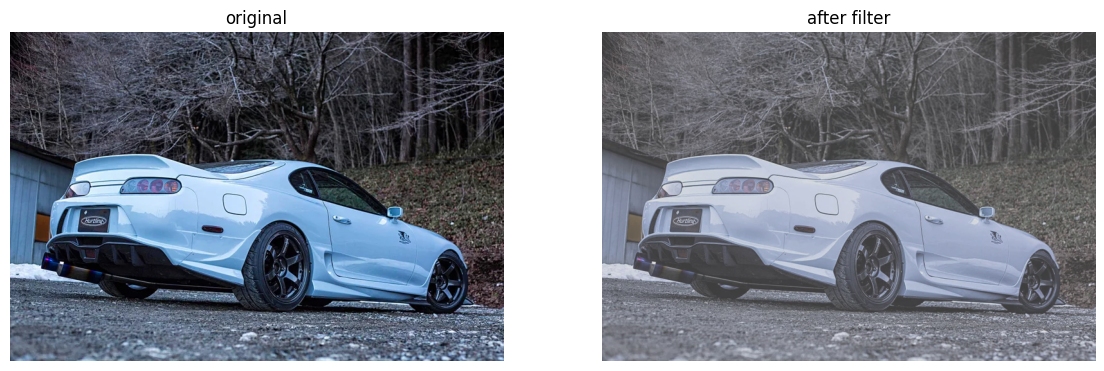

In [25]:
# filter1: Foggy filter
# i wrote the reasons for choosing changes at the changes itself
def foggy_filter(img_rgb):
    org=np.array(img_rgb)
    org_f=org.copy()
    org_f=org_f.astype(np.float32)
    #reduction of contrast becuase foggy looks like washed out images so which such as bright or dark spot
    factor=0.6
    org_f=(org_f-128)*factor+128
    #lightining the image a bit to make sure it does not become too dark
    beta=25
    org_f=org_f+beta
    #gamma adjustment to highlet the mid tones in the image
    gamma=1.18
    org_f=org_f/255.0
    org_f=np.power(org_f,gamma)
    org_f=org_f*255.0
    #conversion of RGB to HSV
    org_f = np.clip(org_f, 0, 255).astype(np.uint8)
    org_f = cv2.cvtColor(org_f, cv2.COLOR_RGB2HSV)
    #saturation reduction because we do not want too much warm color 
    org_f=org_f.astype(np.float32)
    scale=0.6
    org_f[:, :, 1]=org_f[:, :,1]*scale
    #HUE shift because a slight a bluish shift we look good
    h=org_f[:, :, 0]
    shift=6
    h=(h+shift)%180
    org_f[:, :,0]=h
    #conversion of HSV to RGB
    org_f = np.clip(org_f, 0, 255).astype(np.uint8)
    org_f=cv2.cvtColor(org_f,cv2.COLOR_HSV2RGB)
    return org_f
img_filter=foggy_filter(Img)
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.imshow(Img1)
plt.title("original")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(img_filter)
plt.title("after filter")
plt.axis("off")
plt.show()
''' this foggy filter will be good for nautre image , sunrires in dense forestes,rainy images etc'''
''' i tought this filter would choose this image because it is kind of in dense forest and atmosphere looked rainy '''
pass

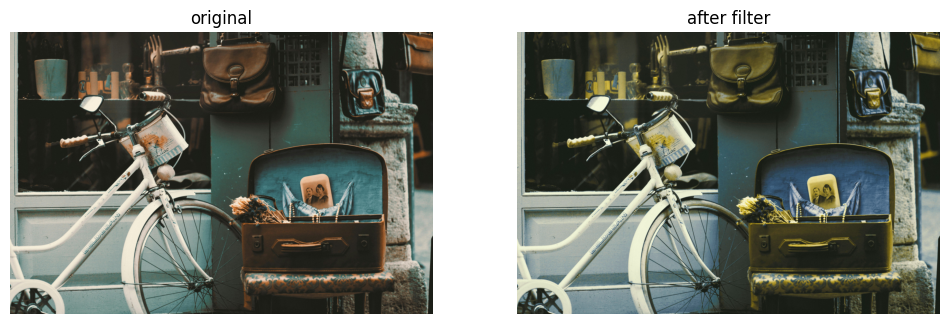

In [51]:
#filter2:
def yellow_filter(img_RGB):
    first=np.array(img_RGB)
    second=first.copy()
    warm = cv2.cvtColor(second, cv2.COLOR_RGB2HSV).astype(np.float32)
     #HUE chnage towards yellow-orange to add warm effects
    warm[:, :, 0] = (warm[:, :, 0] + 12) % 180

    # increase saturation midly 
    warm[:, :, 1] = warm[:, :, 1] * 1.1

    # Clip values to stay valid
    warm = np.clip(warm, 0, 255).astype(np.uint8)

    # Convert back to BGR
    warm = cv2.cvtColor(warm, cv2.COLOR_HSV2RGB)
    return warm
img_warm=warm_filter(IMG)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(IMG)
plt.axis("off")
plt.title("original")
plt.subplot(1,2,2)
plt.imshow(img_warm)
plt.axis("off")
plt.title("after filter")
plt.show()
''' i guess this filter would be nice for showing pictures that hit nostalgia like in some movies'''
pass

## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

In [ ]:
# I changed the image for this question

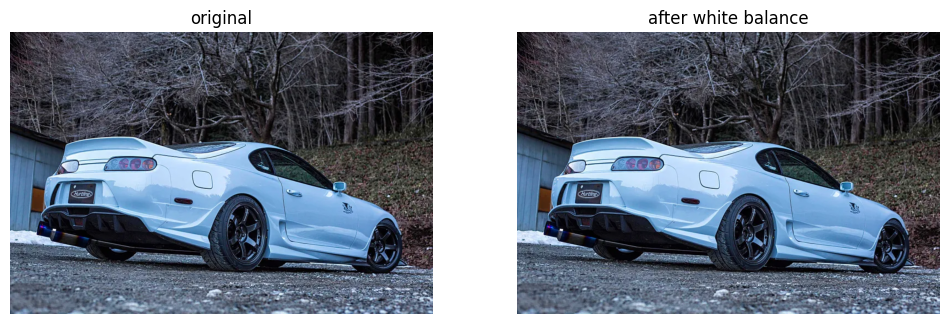

In [16]:
Img1=np.array(Img)
def white_patch_balance(img_rgb) :
    red=img_rgb[:, :, 0]
    green=img_rgb[:, :, 1]
    blue=img_rgb[:, :, 2]
    r_max=np.max(red)
    b_max=np.max(blue)
    g_max=np.max(green)
    scalar_r=255/r_max
    scalar_g=255/g_max
    scalar_b=255/b_max
    result = img_rgb.astype(float).copy()
    result[:, :, 0] *= scalar_r
    result[:, :, 1] *= scalar_g
    result[:, :, 2] *= scalar_b
    result = np.clip(result, 0, 255).astype(np.uint8)
    return result
img_whitebalance=white_patch_balance(Img1)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(Img1)
plt.title("original")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(img_whitebalance)
plt.title("after white balance")
plt.axis("off")
plt.show()                    


## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.